# Jupyter Notebook für die Analyse von Infinium MethylationEPIC v2.0 BeadChip-Daten in R

## Die ChIP Analysis Methylation Pipeline (ChAMP)
Nachdem der Lab-Part der Methylierungsanalyse abgeschlossen ist, erhalten wir als Bioinformatiker*innen Datensätze zusammengesetzt aus einem Saplesheet und mehreren .idat Files, die Fluoreszenzsignale enthalten. Um diese Fluoreszenzsignale (binäres Dateiformat) auslesen und mit dem Samplesheet verknüpfen zu können, greifen wir auf bereits existierende Software zurück. In diesem Fall analysieren wir unsere Daten mit der ChIP Analysis Methylation Pipeline (ChAMP). Diese Pipeline basiert auf R und kombiniert bekannte Software für veschiedene Parts der Methylierungsnalyse (minfi, combat, bumphunter), um eine umfassende Pipeline zur Verfügung zu stellen.

ChAMP unterscheidet bei fast allen Funktionen zwischen drei Typen von Methylierungsarrays, da Illumina über die Jahre verschiedene Arrayversionen veröffentlicht hat. Die älteren Versionen sind 450k- und EPICv1-Arrays, die sich hauptsächlich in der Menge der enthaltenen CpGs unterscheiden. Dieses Notebook ist darauf ausgelegt, die Analyse von EPICv2-Arrays (die aktuellste Version) zu zeigen.

Die hier durchgeführten Schritte umfassen:
1) Einlesen und Filtern der Daten
2) Normalisierung der Methylierungslevel
3) Überprüfung auf und Entfernen von Batch-Effekten
4) Vergleich der Methylierung zwischen Zellproben

### Import aller nötigen R Pakete

In [1]:
# import all needed R packages
library(ChAMP)
library(ChAMPdata)
library(ggplot2)
library(stringr)
library(ggpubr)

Lade nötiges Paket: minfi

Lade nötiges Paket: BiocGenerics

Lade nötiges Paket: generics


Attache Paket: ‘generics’


Die folgenden Objekte sind maskiert von ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attache Paket: ‘BiocGenerics’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    IQR, mad, sd, var, xtabs


Die folgenden Objekte sind maskiert von ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min


Lade nötiges Paket: GenomicRanges

Lade nötiges Paket: stats4

Lade nötiges Paket: S4Vectors


Attache Paket: ‘S4Vectors’


Das folgende Objekt ist maskiert ‘package:utils’:

In [2]:
# set the location of the experiment directory
# the .idat fluorescence files and the samplesheet.csv have to be located inside the directory and it's subdirectories
epicv2_dir <- "../../example_datasets/epicv2/data"

### Setzen des Datenverzeichnisses, Laden und Filtern der Daten
<img controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABzMAAAClCAYAAADYpdD3AAAABGdBTUEAALGPC/xhBQAAAAFzUkdC
AdnJLH8AAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AAMAHwD/hJvKbwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kHFwopD1sfVHAAACAASURB
VHja7J15fFTV+f8/586WyUJWQhIgQEIgEESQJWwCFVxarYpKUVwQtO62Lt+6tP21Wqx+rbUqVUGL
+rWIgIIrSLGCguwiuxDIRggh+z6ZySz3nt8fkxkTIeTccCd3Jnnerxfty+Tk3rM8z3M+5zn3nstk
WeZgDBwMEgDG0C4cgMIBBkA6Rzm0lINAOQ5AUQCDJFCOA4aOrscBBei4Ldx7TWjYFrXlGPP2ZYdt
ES3XQZsBQObi5UTHmaPjcQEAj+It19G9PRww6FBHRfGWk5iYHxiYmM2K+BUXsB3OW2yHCbRFhS1y
QX8RtjHFW4b8pfO2yLn3mkHtL9xbT81it6i/CMbuQMZ4JuovHdiimnERtUW1vi8Su2Wl47gYDLYo
GrtFtY5WsVuV7wdA6yjQVrfpGbu5gP/prXWC3V9E66iX1vHrsSDXOqL3llWumzTVOlzMFkNhbRCI
OgrbIkjrnK/WUeMveuluUd/XK3aL+rSuWkcwduuldQLqLxrFbjU6gtapoZvXCZTu1lLrqPEXzede
3mr8oJ0fBLu/yCpit1b9zVsWV5rm5DXWOgHNMQZxXqcnxu5g1zpqc/JaatDultc535y81CaIicDF
irQOTB0isNjl3HvhjurJBeuoqs0quka4GwX7UfSiau7LBRujZVv8dWQaXk/NfUXLCgR2fz9yMYPg
OtiicB1VGY9gUaZZKDljYtFqnKGxbau5rxq7FbFFNTE5EP4iZDc6+ovWQ6jKJgIwx2jm94Lzgb8M
064TuY7+wjWOd1xjmw2E1hGKEVx7X+mJWodzdTpCD62j8ODXOmptrKu1jqo1jo5aJyDzmsb+Ag1j
t1qt02GcbRnnQGgdLcdFEfU/ndapaueXQMRu4RChQ+yGSp8OZq0jvAbUSesEYl0QEK3DtLXtQOV1
WHfI64TKOlWvvE6AtA7Xw6d1XKeKaB01GkZVTl7DvI5o7A6E1hHOheiodVStXXSM3cGsdfwPLwez
1lEZ9PTQOrrn5DXsyPbGhcmyzBljAJi4wQg8leBrhNA1ofH1VJQTbouGdeQq7Itr2Ieq2qzTOAds
/ETGRfB6utuY1rYY7H5FthiUdQxUPwZ97Na6LRS7e4ZPa2yLAWmLTm0WbYvauEj+EoSxW6d5P1Cx
W1PdRjoiKOuo8I6fQtZT6/BWBkZap3v7S3fyab20Dm9VuWBdm4fK2sD35kyo627SOhr6NOV1QrKO
vnsGe15HVI9RTr5jzcgY+UtnbcL3gACTgjuvo3nsDkKt49/MZKKzGUEQBEEQBEEQBEEQBEEQBEEQ
BEEQRBcgURcQBEEQBEEQBEEQBEEQBEEQBEEQBBGM0GYmQRAEQRAEQRAEQRAEQRAEQRAEQRBBCW1m
EgRBEARBEARBEARBEARBEARBEAQRlNBmJkEQBEEQBEEQBEEQBEEQBEEQBEEQQQltZhIEQRAEQRAE
QRAEQRAEQRAEQRAEEZQYqQsIgiAIgiAIgiAIguhKmnfuBq+vp44gggYpPh6WsRdRRxAEQRAEQQQh
/s1MhQMMAGPn/gM15QBA6qAcb/nX0SuinLeUY2LlGPPW85z3FWxLS1PQQTHxNou2xVfHjtoi2OZA
jLNoWwBA5oBBsJykQx1V2azAvUXHT7QtnHv/QQpuf1G4traoti1C5ZjYa+l6+QvngAJ9/CVQcUyz
eCfqf/zHoM2C2V9a6qdl7IbG/qKXLWoduwOldYTbwrpP7NZN6zDt/UVrraNAbH7Ry1981wxWreO3
sSD2l0DYYkC0jk5xMRTWBqJxTGmZpDXTOgGwRYUDkqSj1hHw/fbW0q4jOWj41ztwH8mhrAwRNIRl
jwOzWGAakaVd7FY7VwZxXqc7rQ1I62izltZrnapGd1Ne59zjLJST10nrqImLemmdQOXke1peR3Xu
sIvzOqGSk1ezhxWIdWpX5HWMvobKHDAKdIgvASLSyRBwErRahIncW0RoKCKOx3+so2jiziBoMCIT
LloNckcLVIOAFSoqgo2kIsAaBAOicPJMRR2hUR0VUTHEARnigc7ABG1bMCBy1jLWHfmWIuYvXMTG
IGhjXHvb8QlPJuovAnFHePEnmJzyJdlYV9uixv6iNnaLCg1FRaJNOCEnGLuF/KWlrEESsDEVsZt1
4C9cjb8oLeU08hfeMhFp6i/BHrtbfFVEHwRC64jYotJii3poHaG28B99n7RO57UO5y22yLT1F9E2
iyb4ZB7kWkfwSUettY6a2O2LtSyItY7oOIvExUDEbtF5nwdI60DAHtRuKmq9ThX1F0XRUeuI9E07
6yve1ARwDsvY0TCmp4GZTCC6F0yFbtAbpaERrn37AYmBWczepG8P0jqqdHdLPiJYtQ7OEXfOpmH0
yuuI7MQJ21gAtI6i4uFcoXVqgPI6IrpbL60jat96aZ02OYmOdDfXNyfPdMzr6Bm7IZqX6wZ5Ha6I
5+T1yuuoycmr8Retc/IQzOtwLbUOtPeX9nLyRt89DAITgN9IBcpJTCxoMgFj8ZcTGDT/9VjH5STB
wC4JqnARZ29djjGxtoiWE2mLQfArqQbBtoiOHwRtTG05Nf0tstoS6m9Rf9HYFhkT/8itT9CJ+ouW
NiYSXDszfsJtEYwlojYraWyLXAd/YYJ1VBO7fePc1XFMjb8ImmzAYjdEbUdLG5NaCXOROKZRjFBj
s6IxQvNx0VHrSGrmVI21jiq/0tFftJz39dI6jHmFdTBrHc39JQC6mwnGCL20DmOAxLW1Ma21jtr5
hemgdZjWultjrcOYN3EmseDVOmrinV5a55zziyxDPlUC08WTEfmrG2BISRLyA19CXORJcpG2iCZT
O5Pg07KOWr59r6bdavqHc+3eGPCNs1Z19D9s304dnQcOwbl1O7jLDRYRIdSHAdM6onpaBx3BGGCU
glvrMMk7Twdz7FaVi9RL67R22GDVOio0P2md87ymnv7CgjuvE5CcvCTmf6J5HbV+oEdeh0mAgQd3
XocJtkdtXkfrnHxI7GGdh80aOyNetCwnWlbFfpRwYeG2QNyoNb9eINqi0zhLARDSWpaTNLZZXcvp
6C+STnVU1RboZ4tMw3IhE7v1jHc9LXaL1lHH2C31wPklFGI3C/LYrSo26ah1WJDbYij4QUjoiBDw
l2DXOiGxNpCC28YCEhe7UHdzzsHdbm9SomUjUw+tEyp6o1utDaCjv7RTVrKGgbfsxjKDQWzNpuP8
Ego6QtJRqwZ9viZUciYsBOpIWue842Kw53VobdBDbDbI50DGQiSv0wNit+iD+ARBEARBEARBEARB
EARBEARBEARBEF0KbWYSBEEQBEEQBEEQBNFlcE59QJA9EgRBEARBEOLQZiZBEARBEARBEARBEF0G
7R0RQWWPZJAEQRAEQRBBD21mEgRBEARBEARBEATRZTDqAoIMkiAIgiAIglABbWYSBEEQBEEQBEEQ
BNFlMNo8IoIIieyRIAiCIAgi+DUbdQFBEARBEARBEARBEARBEARBEARBEMGIfzNT9BMBnIt9T0C0
nBpEr6dXHUOiD0Okjlreu8f2I9euXI+2RfIXit0Ucyh2k7+Qv5C/kNYhrUP+QrGb/IVid9D6ix7Q
OFPsDpY6ki2S1iF/Ia1DWqf7+kvI9qGieP9pXEfJd0O33HFDOAc8HFAEyskt/zpC4YBboF2y4r0e
F7iemnKKQB09ivefUB0V7e7Noa6OQuVkb7mOisockAWcT2m5t4hhu2Sxcm4ZHX6zgvOWNovYIsRt
0SWLlfPIKsZZ0F8UHfzFV05rW5S1rKPPp0VsUTDIugT9xd1is1ykzQKTgc9fRHAK2KIvdgv5C9fe
X9yi/qLoE7tlFbHbo1Psditi/e2RVfgLtPcX4dgNsRjRoS2q8BcuGLtJ6wjYTgC0jogtqvGXYNc6
TgGtw3XUOhzBr3VkrkJ3k9Y5p+7WWusoGmod3t20jo6xO9i1jq7rVB6AdaqGWkdW4S+iWsfTQ7WO
SEwWjd2+euqideQQyOsI6vOQyOtouE5Vm9fxBMBf9NA6Hp3zOjyItY6ueR3ejbROiOR1gl3rOLXM
yavVOoKbYVquUwPhL7JOWoerydcES16Hc3C3G9ztPuOPz9dfjID3exVG1vE3zxkDDOj4+xa+ciK7
vKLfJpAk7wU7rGPLNTuqo+++Irc3CB7Ga2DeCzLBNov0owSx74mItNnXFiZYR+Fykti9jWrKidii
pK0tMua9t5DNCtZRUuEvIjB4fVUrf5GYt28kUVuEhraowl8YxHyaCTq1SRJri1ESi1Gq/Eownpgk
cZvVLXZrWccAxG6fH2hpi1r7i4GJx8VA+IvQvZm2MV6kzUyFv4jGbj39hfnsLIi1DoNYf2utdXx+
JewHgrpNL61jksTsWzetg+DXOlqvDQIVu6Gj1hH1F0nDcmr9SsQWddM6HOCCdTSI1hE6aR1ob4ua
+4tg7FaldTT0K9XrVBX+IqINuCRmi6JaxyCyzgmE1mnxg6DO6wjGbl899dA6BikE8jpM0B6CPK8j
6i+ByusYgjyvIxy7ddY6lNfpwrwOKK9zvnmdgMRuaLdOFfUrplbrCAZGLdepgdA6kuBaVWutozYn
r+XaQHQOPEPrMAZmsZxX7G7PX4yqEweC5UScTs01RTcptL6vaHCFYPBQVU5FWUmnct2pjlq3hQXC
JtTYrIb+EohxZjraotYxQiKfDt7YzbT1v57oL5rbotSN/EXUJlTYjl7+Iuk4X1HsDt06MuioYXTU
Oqwnxm41dZSCvI7dKHYHwmY19xeQv4R67NbUD0LAX0TtlvI6oZ3XCUSeqDvldUIidtPaoMtiKOV1
KHYHS+zWVetQ7A6KvI5o7CcIgiAIgiAIgiAIgiAIgiAIgiAIguhSaDOTIAiCIAiCIAiCIAiCIAiC
IAiCIIighDYzCYIgCIIgCIIgCILoMhROfUAEkT0q1AcEQRAEQRDBDm1mEgRBEARBEARBEARBED0T
Rl1AEARBEAQR7NBmJkEQBEEQRA+jvr4ebrebOoIgCILQBYk2jwiyR4IgCIIgCEKNZqMuIAiCIAiC
6Dk0NTWhpKQETqeTOoMgCIIgCIIgCIIgCIIIemgzkyAIgiAIogdx4sQJmEwmmEwm6gyCIAiCIAiC
IAiCIAgi6JEAgANwyQDn5y7MAXgUQBYs5+EdV0Dh3rIi5dxKx3X0XU/pqI6C5QBAFmgzfG1WvO0/
5/Va7i3alo6ux+HtG5G2uGXBtnBvuyHQFrciZmwuWbycUFsEx0VWYYtugTrylnKi/iJqi8J+JTgu
IrYj6i+KCn9RU05W4y/Q1l84184Whf1FEfMXLugvamK3OwCx261j7BZpi6xiXAIRu7X0F9F45+Hi
bXEL+otL7ric6titob8oXNBfuDqto2ikiTqldQIcuysrK9GrVy9YLBYAgKO5GeWV1UGvdTwqtI5C
Wqf9+UAWtEUdtE5r2wlWraPGFnXVOnJwax1Rf9FT68ghoHU8CmkdLbSOW0etI6S7EfxaR1ahdfSK
3aJ5Hd/YdLXWgYrYrZfWEV2n6ql1ZB4CWidAeR2uo9bRMnYL+4sS3OvUYM/r8BDI66ixMb20jqqc
vKIuJ691Xgc6+YvQOlWvnDy6V05e5ur8Sq89rPPROkbA+61zg8A3Ahi83xJgGpXzVVwSvLdQHZl3
h1bkkwcidQQASfD9VV87OrqmBICzjgsylX3DmFhbhNoMsU6UIHZfzgGjYD8aBMdFtBwTLAcABpE6
MnU2wUSuBzG/MjDxceGsJUqwrvVpSdQWVfqLVnX0jbOW5UT9hTHAIGI4gv6iJnYbVPShmngnGpM1
i90q/IUJ2qJojPD7lagtMu38xSA6Li0VEPEroXa32KKWMdmgwnYMAjGHMcH5hemjdXz9qErrdEHs
Zq0Mr6qyEnZHMxJ7xwet1gEXnKPV6LZAaB2D2L110zqC/ch00jqct9iEJDYuemgdBhW2qJPW8dVR
aH7RSevwENA6jKubN7p8napCR6jWOoKxW0TrGFSsAfXQOgyAwaCf1mGCtiisdSRxm9VS60hMbFPB
7y9dHLvBxec10bHRWuv4/UUwr6OH1oFKn9ZD6zAW3FrHbxMB0Dpa+r5ardPhOAtqHVFN5PMXTfM/
Gq5TQyGvw1S0Wy+twxH8Wscfx0Igr6N17NZS63Bom5MPhI4wCGodvXPygVinapbXwfnndYyqL6R1
ohvaBiWtryeo/dS1OQCbcMIGw/RpCwJh1Ew/mxWd7JmG5aCyHNOpnKjP6OUvTIVPG/SyMa034ANQ
R9GyevqLBH3GJRBxUS8bCwVbVGM7us0vkj7j0l45zjkU5cdHCk+fPo2hmZnBHbtVxCZdtU6w+4uK
uVKP2K1Kn5+jrNJUhaYN/4Dr2FZEXvUkLBf8nNYGpHUCGrsN6Ho/CAndrbGupNitTewOibyOjrYo
vM7RqS16ah3hTRw9Y7dgYNR1nRpka4OQ1TqU1wk639crx6+r1glAHSmvE3xaR43uDgWtE8o5eSN0
RK2gJEIXGuseNNbUBQRBcZH6MKgZNGgQjh8/Do/Hg+TkZDQ0NKC+rg7Hjx1DdHQ06urqUFFRAUmS
wBiDwWBAZmYm+vfvD0miz62TPQY3TRtehOP7j+ApzYFir4O1oYI6hSDdTRAEQRCkuwmCIJ8mQhwj
dUH3xNNkR+X3B2COikT86AuoQwiCIAiCAAD069cPkiShsrISxcXFyMvLQ3JyMhITE1FXV4e+ffsi
OzvbX95ms2H79u0wmUxISUlpc63yHXtQtHYDmquqkX7jLPT92cXUwYRuNK79K+ybXgdvKEfEzx+H
5cIrYeyTQR1DBCXOIxsh15bAMnwGDLF9qUMIgiAIgiAIgiDOAW1mdlOaTpdi8x0PIjojHT9btgRh
8bHUKQRBEARBwGg0IjU1FampqQAAp9OJ4cOHt/vWZWRkJMaPH4/du3e32cw8vWkLct5+H1V7D8Dj
aEafiWOpcwndsG99B47ty6DUlyHq6j8h/JL7IEX1po4hghLnofVo+PAPYO4mGBPTe+RmJudkB0Tw
oJA9EgRBEARBBD20mdlNMUVGIHH8aNTl5OPE5+uReftc6hSCIAiCIM4gNjYWW7ZswZgxY2C1WlFV
VYWTJ0+iubkZ4eHhcDqdqK+vR05ODiwWC6wmM8zHC1D+0ReozTmOsPhYZNw2BynTplBnErrhyt0G
uaIAUdf8GeE/uw9SVAJ1ChGUOA/9Bw3v/xaGhEGwjr4TxsT0HtkPtHdEEARBEARBEIQaaDOzmxKe
nIRRTz6C9VfeiJL1m2gzkyAIgiCIszJkyBCUlpZi7969cDqdiI6ORnJyMiRJgqIoiI+Ph81mQ2Rk
JMYOycR/X30DRRs2ok+DHX1nTsOAX16B3hddCGsfeguO0Iemb/8PzmPfwpiSCVPGZNrIJIKaxo/+
CN5sQ9R1z8A0aFyP7QeJvo1EkD0SBEEQBEEQKqDNzG4OA8BJmBMEQRAE0Q5WqxVpaWlIS0s76+8d
DgdOnjyJBIXjyJJ3oPz3WzQ2NeHi2+di0Kyr0Ct9ICSTiTqS0A1P/jYo1ScQMft/YU7Lpg4hggal
tg7lv7oN7tzj4ADMg9NhmiwjbPwcSDEp1EEEQRAEQRAEQRCC0GZmN0V2OtFQWATJbEZ4onZvSuSV
u1BY5cLgRAsG9abEJUEQBEF0dxRFwZFNm9H/RClqd+6BNSUZqdOzMfT2uQhP7kMdROhvo047ILth
iEoEs0RShxC6wxUFntw8lP58Frjb7f9ApFx+ECioQa/Zr/TI72QSBEEQBEEQBEF0Fgnwfq/Co/jX
WO0vylrKKQLlZAWQBT6EwbnYvRUOeLhgOZG2cG8dRT70LreUFSqn4npatuWn4+Ior8Thf74Ja3If
pP3qGv/PPdxbzm2zobGwCHU5uWe9pucsbT5Z7cLir6vxv+uqcOhUs7eOivfeIrjljtsCAG5FrJxH
8d6/w/4WrKOvLaJ+oJm/cDF/8ZcTtB0RW1QEbVGNv3gUcX9R438cgv4C9f7Sblu4uC3KKmxMJC6K
+oFbQ1uEititBCh2KxrZIuc/2rdWsVtRGbtF+1vUFvXyFy1tUVWMEI3dXJ0f6KF11PiLrIPWaT2/
nPE7j4zjn61H/VdbULp5O+IuuhCD7pqHATOmnnMjMxBaR3Te8KgoF8yxW7XWEdHdCG6t45+HOqF1
OJMAxs5L66iah7qJ1tErdnMVsdutU+yWlc5rHd7Y6N3IdLna/ELKqAKMDtQ+85wmsdsjh4DW4YHR
OtDYX3g38RdPCPiLqNaRtdY6grbjszPN8zoQs52g1zpycGsdVXkdrr0+kDWOY1rndTwq/EXLGK+1
1gG6V+zWQ+twHricvKJlTl4JvZx8MGqdYM/J66Z1VObkg1nrtL6m5rGba2eL5+svqt/MFD2xlDHx
CzLB8ox3XAGmoo6q2sw07Bu0HP2qYVsY+7EPFY+MptNlaMw9gcRJ45A0ZUKbKGKvqETJl1/h+P+t
hK24BDfl7z1rX7cekwaHglW7G3Co2InZY6MxZUjEj+PHBesoCY6z1uPCIKaEmErbFcgYMhVOxVQY
pFAdubfZjGnsCyK2qIP/oZP+0uHsJ2izQtdT4y9MO39RG0s4F/ctJhLHVMRuJtIYrsJXRGOyho7A
1PS5ijoKxx2Nr8kYNJ8DmZaxW41P66R1ONc27gRC65zNFt22Jpxc9yW++ucSxNY2YuDPL8WQW29E
sacZSdG9NNE6UNkWrfTi2bROsMXuTmkd1rEtQss6BkLrqNFjHLD99xW4crci8vJHYMmcft6+z7QM
EjpqHQTAFvWI3aJjoqqcgNbh/MdxUat1uK0JJdnTvRuZPy1rUrzx0e7QRJioiTl6aB1/zAmA1tHc
p0nrnJfWYSpjt4iNcWiL1rFWtdYRaXcn9OLRo0exd+9eDBkyBCNGjIDVag2s1pGCW+sI9yNXoRlF
16lqbUcw5mmZ1xGeLzV2wkDlddCDtI6q/I9oXkcwJ69rXgfax5xA5uS1WKcGQusEe06e66V1mPp8
hJb5ZM0JQE4+GLROa4y+mxkkoRgHg6TdBOC/pkBZiYk7iUHDcv5761BOVVta/be7oRGFH38Bc0w0
+l0yrU1ZZ2kpdj+5ENUHf4C5VxTisoaf9Zqtx5lzYHueAzsLHCiqceN4uRO9rJKqcQHE+1vEFiFo
i6psB4BRtJyk4fhBfJwlwaAk2mat/Qrwvu4t4v8B8b9O+Mu5MEriNqtlHUPBXwISx0T9RdD/RMVV
QGxM63Fm+tiiz19YkNui6KLOKGloYyq0jiRpG7s19ysGSD9ZMDnKK3Di0/XIW/kRbJWVGHPdtRhx
5zxEpw/Eie+/h8fj6VK/CoQfBMJfRJ8S1NNfJGjoBxprHTU6wtdmz6kDkGtPw9g3C1J0Utf4FbS1
2UBpnWCO3ar6UYc6+mxQ6oTtcM6h2Gz+/1bQ1u8YABYbfd7+p3p+0Wse0thfemLsFq2jrlpHTxvT
uI6iZQOhdUR1betx/ve//41//etfmDZtGp577jkMGTKkx8ZuX1zUbZ2qYo0sadnmAPiV6FpaL60T
CjkTrf2FITBax8B08hcVbWFax2StY4SKcdZD64SCv6hZp+qhdUIpJ49unpOXWg8eEXq4bU34ctat
OLl2g/9nzrp6FKz6GNEZgzD0jrk//ry2Dt//5QXUHj6KrPsX4PLPluPyz97r8B7FNR58urcBFiNw
x9RYbMtzYMyfc3H4VDOcbi70+rkaG9PLFlkIOEEo+CmjYKJJH7JuZBNEiNtjCNgi6yZ9GCyxu/54
Po6+vRzH/m8FuEdGyiVTMfTWOYgePAiQJFgsFhgMBt3q15P8qqfOgWrgbifAZUAyeh85Jrpd7D7f
OpaWluLpp5/WJe7YuIIRpwtQKcs/2iwDYh57pEv1IkGxm+aW7mtjO3bsQG1tLdavX4/S0lKaXyiW
ED1Q61D8JrTSjNTd1DfBDq34QxjF48H2+x9DXU4ueMuOouJ2o7GwCOboKKRMv7hN+QN/exUlm77F
hY/9BkPn34ywuNgO71FW78H/rCrF9nwHLs2KwmM/T8A3jw/EBX3DMPv1U1i2ow61dpkGgyAIgiC6
ARU79+DIkndQuPozWGKiMXT+XCT/bArCkvv4V5I2m83/1L/b7UZxcTEOHz6MH374AUeOHEFubi7s
djt1JtE1i0qJlpXEuamsrMRLL73UdQtsswlRv5rljZdcgQKOlfYGLG6sRR0DYDKDRUTQwBAEcd64
3W44nU5ERUXB4/Hg6NGjaGhooI4hiFbk5+fj+eefx9NPP43c3FzqEIIgiBDGSF0QYnCOw4veBDMY
MPDKK1B95BiMkZEwRoQDAJw1ddj/13/AmpiA4ffN9/+Z7GiGs74eXPbAFBUBg9nc4a2qbTKeXVuJ
H0pciIuQkFvmxN4TDlw00Ir37umPpz6twKYjNkxMD0dchIHGhiAIgiBCmJrDOchd/iFKNn6L+JHD
MXju9UiaMhEpJgPWrl2LMWPGIC0tDXa7Hd9//z3y8/ORlJSEuLg4sFaPzDY1NSEnJwfDhw9HWFgY
dSyhCR6PBy6XCyaTCSaTyf9zBtbG/gjipxw9ehR2ux1Dhw6F0+nE5MmTsXz58sDd0GxGzJ//AMPg
dBQtfB4KAJvEMDl7AsL6HIBkYYDR3OPHhXOyzWCjqqoK77//Pux2O5544ok2v2tqasKuXbvw3//+
F7W1tYiPj8fkyZMxffp0WK1WHD16FOvXr4fT6URGRgZ+/vOfIzIyEsXFxdi1axeSkpIwZcqUoG27
EqL2uGfPHtTV1SEjIwP5+flYtmwZJk2ahJEjR5JBE0QLBw4cwJIlS+DxeBAZGYlHH300KOvpcDhQ
XV0Np9MJWZaRlJSEXr16BeResizD5XJBURSvnmYMVqu1U5rabrejuLgYhYWFsNvtCAsLwy9+8Qsy
PIIgAgJtZobcoo/j+Lsr4aytR8nX2+Cqb8Co3z+C+Asv8E5IbjfqC04geSP8HAAAIABJREFUZki6
t7yswONwIOeN/0Plzu9gCA+H1CoB1B51dgV//bwCm4814beXxSMhQsKuAgfe+KYW86ZwTBocjqeu
SURpnRuxtJFJEARBECGPs7oGztp6JE+dhPQbZyFx/GgYw8NhATB79mzs27cPa9euRUFBAa6++mpc
f/31qK+vh8lkarPQdjgcyM3NRUFBAYYPH04dS2jC6tWr8etf/xq/+c1v8Ne//rWVNlZoV4Q4J717
94bZbMann36KzMzMwN+QMUjR0YhaMA8jr/w5zFnD8aed25DUty+q/3c8wrIuhSGqN61ru2m7CgsL
sW7dOuzevRsulwtZWVmYPXs2hg4dCsYYKioq8Nprr2HPnj1t/i4tLQ0PPPAA0tPTsWrVKhw5cgQu
lwtz5szByJEjYTabsWXLFhw8eBA33HADkpKSNMsvOBwOHDt2DGvWrMHq1auRkpLSZjPT6XRi27Zt
eO211zB48GBkZWWhqKgIb731FhobG3HJJZfg22+/RVlZGYYPH459+/YhISEB2dnZ2LZtGw4ePIh5
8+aRQQaAJUuWoLi4GKNGjUJUVBR69epFD/gQxE+orq7GqVOnwDnH0aNHwTlv4yd2ux0OhwP5+fnY
sGEDcnNzoSgKbr/9dsycORMAsGvXLuTl5cFms2HkyJGYOHEiKisrsWzZMrz33nuw2+2wWCxYsGAB
fvvb36KmpgZbtmzB+vXrwTnHm2++CQBoaGjA9u3b8fHHH6OkpAScc3z++eeQJAlbtmzB888/j/37
96OxsRF/+9vfMHv2bCQlJcFoPDN9X1dXh82bN8PpdKKhoQFvvvkmmpubERMTgy1btgAA8vLy8NVX
X+Hw4cMAgFdffRUAsGnTJjzxxBPIycmBw+HAgAEDsHv3bvTu3RvffPMNVq5ciQMHDmDSpEl48cUX
AXg3hZcuXYrNmzejvr4e999/Px577DEUFRXhnXfewcqVK1FeXo7k5GTs2LEDb775JsxmMx566CFY
rVYyRIIgNIE2M0MMxhguePheOCqqcPiVxVAkhoSRwxAWH9t6RQJF4fDYHajNOYYDf/snKr/bB4PJ
hIkvLkT/K2ac8x5NTgW/W1WGLw/bcOEAK349NRYuj4LUeDM++K4Bz39RhdEDw/DU1YlIjjHRoBAE
QRBENyBm6GAMXTAX4Ul90GvwoDanOBiNRowbNw7jxo3D9u3bkZKSAkmSEBcXB1mW0dzcDM45amtr
UVZWhoqKChQWFqKhoQGpqalITEw86yKcIEThnENRFMgyfd6AUIfvG7+7d+/G5s2bkZKSgl/+8pcB
v68UFoZKlxNOlwtX3jgHdXV1WDWpHBfNvQFSBG1mdsftlpKSEixZsgQnT57E5MmTYTKZ8M0332Dp
0qW46667MGTIENTU1GDHjh3IysrCtGnTIEneL/9ER0cjMTERhw8fxo4dO3DxxRejoKAAGzZsQFJS
EsxmM5YvX46ZM2ciMjJSszpXV1dj8eLFOHLkCOLj4zFy5EhUVVW1KWOz2ZCbm4vExETcf//96N27
N44ePYpFixbhq6++wujRo1FaWor09HRMmjQJJ06cQG5uLkwmEw4cOIBp06Zh8ODBQZ5nCU2by8nJ
QVNTE9xuN+Li4vDHP/4RQ4cOpcBPEC243W44HA5YrVZYLBbk5uZi165dmDBhgr/M888/j4ULF2LK
lCmw2+3Yv38/FEXB5MmT/ZuZa9euxXvvvYeioiI8/PDDmDhxImw2Gw4ePIgjR45AlmVERUWhsbER
AFBWVobVq1djxYoVAODfzCwtLcUnn3yCDz/8EPX19WCM+T8b9sknn2Dv3r1oaGgAYwx/+ctf8Npr
r2HTpk1ITU09o235+fmYNWsWwsPDceedd+LAgQNwu91ISEjwl6msrMTGjRuxZs0acM79m5knT55E
ZWUl3G73GW9lbt++HZs3b8axY8faXGvTpk3YtGkTcnNzIcuy/0jriooKFBcXw2QyoX///khOTkZ5
eTleeOEFGI1G3HPPPbSZSRCEZlBWKeRWfQwZt/4KXFZw+pstqPrhCJoqq5Dg/zUDlzgaCvPxwbAJ
gMTAJAPSbrweWffcjsj+fc95eY8CvLqxBt8VOnDblFh8caABv3zpJN67px8u6B+GuEgjvjpiw9It
tXjq6sR2rzPtf4tgNQH/eXQAjRlBEARBhADWpET0TUrssFxsbCy2bduGCy64AGazGdXV1Th9+jQc
Dgfi4+MRHx8Pxhjq6+uRkpKCvLw8AEBKSgp1MtFpOOcYM2YM4uPj8dJLL6G2thayLOOyugPIoDcz
iXNw6tQpOJ1OrFmzBtnZ2UhMTOzyOlx66aV46KGHYHr9UvCoKIAe7kB3fHnswIEDyM3NxcyZMzF3
7lxIkoTY2FgsW7YMhw4dQkZGBmw2GwAgOzsbV111lT95zJj3yOzNmzdDkiRkZWUhPDwc69atQ319
PT799FOkpaVh8uTJiNDwm6vh4eGYPn06Jk2ahKioKKxduxZbt25tUyYyMhJXXHEFZsyYgbS0NL8W
CAsLA+ccZrMZBoMB9fX1/jecysvLUVdXh379+mHy5Mn+hwrIHrVl7NixiIiIgNPphMfjQWxsLMxm
OsaaIHwcOXIE3377Lfr16weHw4GcnBxs3LixzWamT2fGxsbi4YcfRm1tLQBg4sSJ/t+PHDkSM2bM
QGlpKYYNG+Zf2zz11FN46KGHwDmHwWDwa4yYmBhccsklSEtLa/MWaGRkJMaPH+/fJJQkyf/7l19+
GS+88AIA4MSJExg9ejTq6+vh8XjaiVs/fmrh4Ycfxi233ALOeZsHSPv3748bbrjhjAdKFixYgNtv
v73Nz3xx+qqrrsKoUaNgt9uRnJzs//3MmTORnp4Oh8MBxpi/H6ZNm4Zp06a1uZZvQ7ihocG/WUsQ
BKEFtIoK1cWfQcLMD/4PHwyfhIIPP8eAy71vWzKjEebIaLjr6sFMRox6/DfIuGU2jIILnt15dry3
rR6Dehtxc3Yv3Ds9Fne8U4LL/l6E9+/ui8F9zLgpOxqZSe0L5BnPn8DJaie2/j6dBoogCIIguhmZ
mZmIj4/H8ePH4XK5kJCQgFGjRsFsNkOWZRgMBnDOMXToUKSmpiIsLAy5ubm0mUl0GofDgbKyMths
NqxatQoVFRVoaGiAzWZDv4sVZAykPiLaZ8SIEQgPD8enn37a5fdOTEyE2WzGI488gqSkJFTScHRr
fG/Z9O3bFzExMQCArKwscM5RVFQEu90Om80Gzjk2bNjgP6pvyJAhmD17NjIzMxETE4OGhgY0Nzej
rKwMVqsVX3/9NcrKyjB//nwkJiZqeoxoeHg4Jk+eDEmSUF1dfdZNR4vFgvT0H9f2jY2N2LFjB4qK
inDHHXegT58+uOiii7B69Wrk5eUhNjYWiqKgvr4ec+bMQVRUFBlHgHjttdfQ3NyMa665Bs3NzdQh
BPETDh06hG+++QYDBgxAUVERbrrpJowaNapNGZPJBLPZjMjISMyaNeuMa3DO8Ytf/ALZ2dno06cP
LBaLPzYOHHh2EZqSkoIFCxac8fO+ffue9ee+6/muHR0djbS0NBQUFLTbNsYYLBYLGGMYMGAABgw4
82WSfv36Yc6cOZgzZ84Zf9veQyYjR44863d3L7jgAlxwwQVC/e7btP3222/JCAmC0BQj4P08gKIA
Ejv3E2mi5YAfP6AudVCOw/uZmw7LcUABIKGDOnLvNRk6bgvnHZcDvPdFy721aLOvHGPnPl6H85Y6
nqO/JZMRFVt3ouLAD+h9YRYsMb0w5qnf4fArb2LG8jcQ8ZM3MWXefh9yDnx6oBFOmSOv3I2vjzbh
3hlxeP+efrj73dO47tViHFyYjqgwCVOHRvjbwjlgaOmcy/5+EgWVTnzzxCD0jW27V+7hgFFg3eVR
AIOAjcmKt4xQf3NAkjoux+G9d0c2K+QvAuPX2hY7sh3OvXUUbjPE/IqL2KKvrKIA4Gd9ssr3VBhn
krdv9PIXqeNyCmvxA3RsY5LGttjaXzqKdwYBfwlEHUXHRchfWuxWyF9UxG4Rf+FMx9gNwfmFd3w9
X+xm0Hj8QsAWReqoeewOhNZpqWOwah3f9cBE/YUhMTGx3beb6urqUHyqBBdddBE4vMn8gwcPnt9c
2eLTDGL+Ion4n9LSZh38RS+t4+ufYNU67fmV0+lEbW0tGhsbMWDAAPTr1w9hVivq6uqQFHMAjJW1
m9wX1jqifiV4vc7ML5LonCqidVqu19O1Duccn376KRwOB2699VYAwNix4/Dgb37TsY5oiTud1Tqc
cyxevBhNTU0YP348xowZg7/ElyGai62PhdcGUpBrHYjHbt20DgNE3hvsyBYHDBgAj8eDnTt3Ydz4
bERGhOPbb79Fbm4uLrroIjQ3N/vfoHM6nZg0aTIUzvHlhv/g+PHjePLJJzF69Ghs374dixYtgsvl
wtSpU7F161bMufEmZGZmnvPI9s5qHamdyeNstlhXV4ePP/4Yq1evxhVXXIHLLrsMVqsVkyZPQVJy
CpzN3jefvv/+e/Tv3x9vvvkmDAYDpk+fjunTp4MxSZ3WEVynCsVuwbWBz366Mq/TRsOw4NY6Miiv
Ewit0yV5HTVaR1B366V1AK8tdpTXaWxsRHV1NdLS0iBJEq6++mpccsklHc7nrXE6nfj000+xdetW
PProoxiUlh5wrRMXF4eFCxfi6NGj/odjfuovRqMRcXFx/jf+1fY3bzEGhWuf10lPH4yNGzeirq4O
sbGx5+Uvsi8PGqRaR5Xu1lHrBHvs5hC0RRVahyv65ORV53U00jo+3a1bHlQwJy+c12lnnI2tGysi
6vwdKGAIXCDY+I1BNIHNxIy/wyDSyggNAnX0ZiE7vjdU9KEB524PbxmX9upnMJkw8pF7sf9vi3Do
768hYfQIDLjyMiSMvhCOikr88OpSjH/+z8KJ82fXVuCzfY148soEGAwS/r6uEnUOjvtmxGLZr/th
yaaa9idnAFf+oxC55W5seiINqfGmswppLok5nshiUgEgidgEFxo+r01AcFEguggSEFetbVHY/7RK
YPsmi3PYoqIokBUOWeFY8vpreOONJSgoKIDH44GiKGCMQZIkJCYmYv78+Vhw513o368fTEbpnE8N
KxD7Vg5v+R92nv7SpqzSEjw1Sr746gjBCU04WSJpY4v+vuEd96Hopot/kS9ii4LjrDZ2QyB2c0HR
pHnsFkxEKNwbx5hAHUX8xTefcpF+hNimviJoi7KauKilv7Re8GoUu7lAn/vsC4K+omqzXmOtI2qL
TCOtYzAY0Oxshsls8Te8veOF1MRuNZvMQhtNaGmzhrFb4eI6Qg+to3B1ddRF65zFX0wmExISEjB+
/HgsXboUVqsVcosPNv5rLpp3rTwvrdOZ2M1EHrZQqXW4RnNq6/lAK62jeewW1Dr8PLWO3W5HXl4e
FEVBdnY27n/gAcgyF9qo4Oepdex2O6xWK8xmMxYtWoSrr7kWVf8vq+MxVOkvIh2kl9bhKtZXumsd
dv5aZ9SoUbj++uuxfPn7mDXrWkRFRiIjI6PNNy4nTJiAxYsXw2w2IyY2HmAMA1L745lnnsGePXuQ
lpaGO+64AzU1NVAUBW+++SaGDRuO7777Dms//wzJycn49a9/jf79+wdc6+AnWqesrAz//ve/sXXr
VsyaNQtXX3014uLiAAC9ekXjwlGjkZ973P9GaUNDA2JjYxEeHo6NGzeib9++yBgyVJ3W6ch2VGgd
LprhU7F+0SKv06nYrafW6S55HR5cWud88jpKANapXPTBUtHY3WKLXHADCYK22NFGxfjx4/HUXxai
MD8fR44cQVhY2BnfbxwxYgQmTZqEiMjIs8Ynt9uNnTt3wmg0wm63w+Vyw2AyBVTrREREYPbs2XC5
XP6jo3+qdRISEnDbbbfhwIEDnc/r8LYbKlrldQ7s34d9e7/HyJEjER8ff/5aR6+cvBp/EdE6gm0W
1TpcpdYJ5tjNFe3zOqKxWzSvIzpPq87raKl1BP1FzTpVldYRaLdwXqeddarRVxeTgBUwAEbBcgZJ
zAgkJpY017ocY2JPJAAtTwUwwXIaXq+jtjCjAcPuvBVQFJz+ZiuOvv42bCeKMeTWOVCcLtQcPnrG
35xrnOsdHFazAfFRBlw9Kgqcy3jms0ocK2vG41cm4LeXnTkBGSSvQf/ypZM4etqDrx4biIHxprMa
pMkg5igmSbycUH8LlmMMMDEx+xbyF0EbU1POwMT65nxtzJd0Pn36NF5++WUsX74cZWVlZ01Gc84h
yzJKS0vx7LPP4tlnn0ViYiKWLl3a5jswP8XYxf7SGd8XtTGjClsU/VqMGn/RzGa7Uez2P6gShLG7
M7Zj1Ph6kiQm/hgDjIK2aJa09StRfxFui9Zah6mwHZ38Sq2/MI38pby8HMl9+sDYshApLS1t80Rx
oP1Fr9gtqiP01DrCtqOT1vHV8ae2yLn3VAjGGOrq6pCbm4uqqiq4XC6klpYiNkjXEHprHS1tzBQA
fzEbNLTFdsrV1NSgvLwcRqMRJSUl+P2TT2LUqFFnHLd2tvpJgjGvvXFpbm7G4sWL4XK5cN111wEA
dt4UhtFMw3WqpF3sDpgtQlt/CYTWEY3dHWmd8PBwXHvttZgwYQKqq6thNBrR2NiI/Px8xMTEIDw8
HFarFdHR0W3+bsyYMYiIiMCpU6fgcDjQp08f9OnTB6tXr4bJZIIse1BbU42bbroJH3zwAb766ivM
nz+/S7XO6dOnsXTpUuzfvx933XUXLr744jbtMEjetza3bduKpqYmZGdnY/v27Zg6dSosFgsKCwtx
6tQpDB06VL+8jqDtiPpMINYGplDQOkGe19Ha97tK65x3LlJjvxJdS6vSREy78RO1nTFjxmDMmDF4
/vnn2y3zi1/8ApMmTYLBYDjDzhRFgc1mg6IomDhxIvLy8pCQkNDmW5KB0DqLFy/G448/jnnz5uGf
//znWcslJydj0qRJGD9+PJqamvzfUxbN6/hs0BiAvM4X69biz3/+Mx599FGMHz/+/PS0aIwIgRyj
MURyjEEdu3XK6/jeyBTpm1DYwwrlnDx9MzPEYUYjht09HwljRqJ8+x4cWfwOmEGCwWJR/ZFlzjku
y+iFUcneCXDe5FgkR5tRVOVGr7D2w+OvXj+FI6Uu/Od/BiAt0dyujYt+2YPp1ZcsBMa7i+5zzz33
YOXKlWhsbOzUx7orKipwzTXX4Oabb8bvf/97/4fBie5ji0QPskfqgqCgsLAQgwYNCom4c+zYMUyb
Ng0mk/eUhpycHGRmZlJcJL/q9Fg3NzejpqYGDQ0NWLduHdauXYsdO3agpqYGi6bIuDaNepRs7Ow0
NDRg7969cLlceOuttwAA119/fYebmVrEHafTicjISBgMBvzpT39CbLgJ8Sf+SXqxG1NdXY19+/ah
b9++yM7OBgCsWbMGiqJ4j8cOC8PWrVuRk5OD6dOnY/DgwQCAqqoqOBwOREdH+9/AycvLw3/+8x/M
nj0b27dvR2JiIjIzMzFw4ECcPHlSszpzzuF2uyHLMhwOh//0HYfDAcYYTCYTbDYbPv/8c3z99dd4
4IEHkJ2dDYPBAJvNBoPBAEtL7mHPnj04dOgQ5s6dC4/HA4PBAJfLBUmSoCgKwsLCaH3Vg+YX6nKy
x1Bh8+bN+NWvfoVBgwZh7969bX7ncDiwa9cuuN1uFBUVoba2FhkZGUKbmeeD2+2GzWaD0+k8Z7nb
brsNdrsdR44cQVpaWhDZuPcEN0bGHnIxh0aM+ibYoc3M7uBMBgmJ2eMQMyQDOW+9h5NfbITEZbgb
GlVf68tjdejfR8L82BiEmxkuGxFxzvI3Lj6JvSecWPtQKgb3MZNjhzj5+fm47rrrcOjQoXY3Mc0G
A5J79cL4/v0xa8QINLhc+OTwYewsKkJ9c7P/7zjnWL58OXbs2IFXX30VV1xxBXVwD0aWZTQ3N8Pt
dsNkMiEsLKzdD853dzweT8vxNC5Vf2e1Wv1PWxI9C7vdjvz8/IBuZgZiAesjNjYWdrudBpLoNC6X
CzU1Nfjiiy/w+eefgzEGi8UCs9kMxpqhMKnj87qJHonNZkNKSgpkWUZFRUWX221Zmfd7rr169UKW
Yy8iDTINSjfXeJ999hlcLhfuueceuN1urFq1CgMHDsTIkSPBGAPnHB999BHy8vJw6623gjGG119/
HZxzjBw5EpGRkXA6nViyZAnGjRuHsWPHIjc3FyUlJfB4PKivrz/7kX2dpKqqCv/4xz+wadMmeDwe
lJeXo7GxEdOnT0diYiJuv/12ZGVl4fPPP8eePXvw9NNPt9mUHDt2LJ588kk0NjZi69atGDNmDC68
8EI0NDQgIyMDy5cvR1hYGEaOHImsrCwyEuK8OWQ/ibcqvkad7MDI8FTcmTgdvQzh1DHEec3XdXV1
Z12fu1wuVFZW4sEHH4TVasWGDRv8D2wGEt+DIh3lTBoaGiDLcqdeQggkZrMZUVFRsFgsZGAEQWgK
bWZ2IwzhVox89AH8sPgtNJdXoLm2Tt1i38lQ3aTgH/+tRlKsEVeMiESEpf3tyQf/XYrvTzjx/j2p
GJJkET46hQhOli1bhj8+9hiKy8vbCCGJMSRGRuKhiy/GvDFjEB8R4d+0llqS1XeMHes/n/6xdevw
znff+Tc2CwoKcPvtt2PJkiW49tprqaN7GDabDSdOnEB+fj5Onz4Nu92O8PBwJCUlITU1FYMGDfJ/
a6enUFVVhS1btuDYsWPCf8MYw7hx43D55ZeTUfVAdu/ejeHDh4dMfX1HgvrnEUlCVFQUDSTRacrK
yvDDDz9gzpw5Px611aJBXO/9Gjj6JSSjiTqqB8I9TlT/7wx4Tn6PuCe/hXnQ2Da/dzgcOHbsGNxu
N1JSUiBJEk6dOtUldZNlGZWVlfB4PHjkkUew5ToOJZo23X+cK7pfmxISEjBr1iy88847mDdvHoxG
I7Kzs3H77bcjPT0dgHfzb/78+Vi1ahVuvvlmcM6Rnp6Oxx9/HGPHjoUkSVi1ahUsFgumTZuG2NhY
XHnllXj++efxu9/9Di6XC08++aRmdY6Ojsadd97pPwq5NWazGcnJyYiKisILL7wAm812RplevXqh
d+/eiIuLwx133IGoqCiYzWbExcXhhhtuwLRp08AYQ2xs7BnH65I9Ep1aS3ls2N2YDwUcJ5urAAAP
JF0GM6P0JtE5GGP+fz8lMjISl19+Ofr16wdJknDttde2+/kMLQkLC0OfPn06zJWEhYVBluWgewMy
JSUFEyZMCKmHcQmCCA1otu9GGCwWDJ57HaAo+P4vLyC8T6Kqv6+2eTCmnwVWqwG/X10Oj8xx5YWR
iLScueh+4YsqfH3cjr/PTcSFqWZV358ggo8FCxZgzYoVaHQ6/QnoMKMR6+64A5MGDIDEGCTGYJAk
oOWbVf6FHwCD76vrnOOFK6/E4z/7Ge5avRprjx4F5xzl5eV4+OGHYTQacdVVV1GH9xAqKiqwceNG
rFq1Ctu2bUNTUxMsFov/7cxx48bh/vvvxzXXXNOj+qW8vByffPIJ1q1b1+bnLpcLTqcTkiTBYrHA
aDS2WWDdfffdtJnZg31p6tSpbWwoMjIyaN/UjY+Px6lTp9C/f3+Eh4fDbrfDaDSiuLgYFosFJ0+e
RHl5uf/oocjISIwYMaJLEgNEaFJdXY3jx49j4MCBZyR1as1meCzRYIYw6qiehuJB1R9HwFNVhMip
C2CMOfPIN7fbDYPBgKSkJMyfP79Lk32cc5hMJtxwww14/fXX4Xp2DCA7wYxmGruWNUS3W48bDJg8
eTJGjBgBh8MBAIiIiECvXr38b/JYrVZcddVVmDp1qv/4QIvFgpiYGP8Rs9deey1kWUZUVBQkSUJq
aiqeeeYZuN1uSJKE2NhYzepsNpuRnp6O9PR0FFS6sWpXPXYX2BAVJsHuAkrrmsBhA+dmAO0l1Uv8
epWjBrHh9Zh/cQxmj4vX9C3SwPor+WQoUOisxH/rDmN6fTTmVSXjSJgdb7CD6GWw4s7En1EHEZ3C
arVi4MCB6Nu37xm/M5lMSE1NheOrr1H/ymLw8gqE7/4m4HW64oorMGTIkA6Ps83Oztb9GO+zccst
t+CWW24h4yK6blmgKDh16hQOHz7s3+CPjIzEhAkTgs4/uhK73Y76+np4PB7wlnx+SkpKSJ+U1202
M2tqarBt2zZs2rQJBQUFsNlskGUZiqKoWnyYzWbExMSgf//+yM7OxhVXXBFSbxNIJhMSJ4yBMTIc
/S5XJ+Z2F9ox66JeeOmmPnhweRn+/HEFOOeYOTwSMRESjC2vXi75pgYrdjfggRmxuGRoJCxGeiUz
lIP99OnTsXP7drjlH4+9emDSJDwybRpSY2L8b1/+uED9SfLBYABTFMBgABQFRgCJERH48NZbceeH
H2LlgQPwyDKKiorw17/+FVFRUZg2bRp1fjentrYWH330EV566SVUVlYiKysLmZmZiI2NRVNTE06c
OIHTp0/j8OHDPW4zMyEhATNnzkRSUlKbnx86dAibN29GQkICJk6ciAEDBrTxvYkTJ5Jh9WAkyfvU
kNPpRElJCfr169flm5mKoqCqqgrFxcVITk5GSkrKWcuNGjUKu3fvhqIoCA8PR2lpKcLCwvxHzSYn
JyMzM9O/qVBRUYF9+/Zh3LhxiIyMpMEmzoAxhubmZnz55ZeYOXNmmzd/fzfgBEb1ckEBHd/Zndno
+gJ57mPg3Lu2i5UScMnTz0CuKkTCwoMwpZz97XXOOQwGAzIyMmC323HXXXd1eQJhxYoVWLliBY7f
nYABD6yEsXc6DSi673eHzGYzevfu7f/vr4858O9PyiExINZqwPEKFzwKfnIkoKPln89wfR1U750r
OTAgwYRFNyfDZNCm57Ycs2PJN7U4Ufnj99jcMoetWUGzW/EfietR1F+7tM6DhZ9V4qUN1QCA1Hgz
5k+JweUXBO8cT591+4nm4wp+sJ/Ex7V78LPoEbg4KjMo6nXKWYPMC1TNAAAgAElEQVSj9hLcs7cW
1hfewEVjL8SURXNR2FxJg0Z0mkmTJmH79u1tHib+KZ7iU3Dt3w9J5UsjnaVv375n3Vw9Qx9t3BiU
fVpfX4+TJ08iMjKS3s4k2sXhcOC7777De++9h6VLl/q1kSRJWLFiBS688EIMHTq0w+sUFRXh+++/
x/Lly/HZZ5/B4/GAMYa4uDgsXrwYM2fO1PRBsPbWHHa7vc0pFmazOeD3PReVlZX48MMP8fLLLyM/
Px+KokCSJGzfvh3p6elISEgISbsJ2c3MU6dOYeXKlVi/fj2cTifcbjeqq6tRXV2NpqYm/5nhas4N
932g2Pc9t48++ggvvvgizGYzMjIy8MorrwR9ks1jb8ap/26BtU8ish5Qt1gfnmTB1lw7lm6pwz9v
TsLD75di4WcV+PuGajz4swSMSY/AHz8qxbHTzRiQYMYvR/dCpKVnfvOuO1BeXo7LL78chw4d8m/6
M8bw7pw5uHr4cERZLP5EM2t585Kf5eEAJsve9bbHA97ylo0E77c1l86eDQBYsX8/ZEXB7t27sXbt
WgwePFhImBGhiSzL2LFjB95++21UVFTgqquuwoMPPojRo0fDZDJBURScPn0aW7Zs0f24KZ/t+zaK
umphsmDBgjN+vnTpUuzYsQMDBw7EPffcg0svvZSMifD7lO8puvz8fP9bHl2NT6B///33OH36NCIi
IjB+/HhMnTq1zdtOVqsVU6ZMQWFhIaqqqtDc3IyUlBT07t3b/5Rk6ycBU1NTIUkSfvjhB2RnZ9OA
E2fgcrlgt9tRW1uL0tLSNr975NZUwBoLZqbvZXVXVtrfwQr728hxH4bMvZvWCYY+mOhpQFTWZZCs
546Hzc3NyMnJQV5eHq699lr/cZ9dETPDwsKwcOFCJEouhJ34JxCbDNCbmS3ri+7XpmfXVWF3vgNu
+cc1U61dRnm9BwBgMjDYnUqn3krNLXfimkUnwQAwMIwdZMX/uzoBBpXfetlyrAmLN9Ugp8yJOrsC
j9xebTr/qqKscNQ2yaht8vprab0Hx0qd2JFvxx1TY9E/zkT2GOQccZTgLyUfo9zdgANNxTgcfQr3
Js3UtU6nXbXY3ngcqZY4XBgRCScAi8GMUZEDsaJqB75tPIaLo4bS4BGqcTqdaGhoOOf6ijOAGwxd
FiwOHDiAZ555BoMHD8Zzzz3Xrj5es2YNzGYzrr/+eiFd4vF4oChKwL9luWXLFtx7772YMmUKVq5c
SUbWzSkpKcFtt92Gr7/+GpIkYdmyZZg9e/Y5HxCQZRmbNm3C3LlzYbPZ2uzfREVF4aabbsLEiROx
devWc9775MmT+MMf/oAPPvjAb+M+e6+trcXdd9+Np59+Gg8++GDA2q8oCsrKyrBo0SK88MILUBTF
f1rHsmXLkJKScs6+CASVlZW477778NFHH6F///7IzPQ+lFRdXY1JkybhhhtuwMqVK4PuiGoRQmoz
s66uDh9//DHeffddNDY24vTp06ioqFD19mVHgV2WZciyjObmZtTV1aGwsBCMMezbtw9Hjx5FZmYm
3nrrrYAM9g+vv4285R+i38xpGLLgZkQN6K8+2VNXh8OL3kDciEyYIqwq2g7U2GVUNCh4dWMNXG4F
L96YjFveOIWteQ78dV0Fwi0S6uwe3DQ+BvdcEovkaCOJ/hBl3rx5WLduHWpraqC0Olb2q7vvxvj+
/WGUJLBWS1jOuf/paf+Dwj9Z5nK0bGwajWCcgykKzAYD3rj+erhlGR8cPAhFUbBo0SKMGDEC8+bN
o4HoplRWVuLrr7/Gvn37MG3aNNx7770YP368//eSJKFfv3648cYbda9rdXU18vLyYDAYMGjQIMTH
x3fpxiZBiDBhwgSsXr0av/zlL9HY2IjExETU1NSgoKAAkiShuroaLpcLkiSBc47U1FQMGzbsrG9u
/vDaUjCDEcMW3AxmVpdMlCQJvXv3xpQpU1BcXIy8vDy8//77KCoqwm233damrMFgwODBg/3ivrGx
ETExMTAYDGhoaEBNTQ0MBgPq6upw4sQJlJWVoaqqCoWFhRg7diwGDhzY5YKfCF58x+JMmzYN9913
X5vfDct/G5I1AojsQx3VDdnU/B+80Phn1Mt1bX5e46mAjbuQcvMrMMT2O+c1srKysG/fvi6v+969
e+HxeLBz5078KX4LDJ4aGtBuyrOfVWD3iWbkVbjQ4JDbPbLU5en8BmGzm+NQcbP/vwsqnfiu0I7/
d3VvZKeFC63LP9vXiGfXVqKiwQO33HXnqnpkjiqbByt31WNHvh13TY/D9WN6keEE65zLZZS76xFh
sGJh8uXY3JCDvfZCnHRWI9Wi37HBRc5q7GkqxPReQxEhVcAlSZAMBvQ2RcEDD3Y25tJmJtEpNmzY
gEceeQTXXXcdXnnllbOWYZIBrAuPZayursb69etxwQUXtFvGbrfjN7/5DaKiooQ2M202G4qLi+Fw
ODBmzBjhujQ1NaG4uBgmkwlJSUlCpwM5nU6cPn0aJSUlZGDdmMbGRtx2223YtGkTGhsb/fsqd955
J8LDw895Clt5eTn+8Y9/+P+uNfX19QgLC8O2bds6rMNHH32ENWvWwO12n/X3dXV1eOqppwK6mVlY
WIjnnnsO7733HlJSUhAfH4+mpibs2rULM2fOxOLFizFjxgxV13S73fjyyy/x7LPP+t80tVqt+Oqr
r4SOiF20aBHWrVuHjIwMvPvuu/6Hxt9//3088cQT+OCDD/Dss8922UOeWuLPEv10g+JstLatc4ll
0XKilJWVYcXKlVi5YgVKS0tx6tQpVW9cni+cc9hsNuzcuRMHDx5Efn4+xo4dixdffLFtuZb/6ajN
7fVP77Gj0FxeieINmxA7MgvhKcmQWhJ5Iv3IPTIaCk7AGB6GlEumnL1MO3XccdwBu0vBo5fG4N3t
tXh+fQ1W7q5HvUPBfZfE4P4Z8YgKk9pti5abmmr7UatyquoXxP5yrj7ctWsX5s+fj7y8vDaBfmjv
3njvppswKiUFhpaNTEWWwZ1OyA4HuMMB7nIBLcfJSmFhkCIiIFmtYKZWyXBJ8pbh3Pv/jMFqMuFP
l16KWocDXx4/DpfLhXfeeQdp6emYMnlKp/3lpygKb1UNpstYd7UtBqu/HD9+HHv27EFYWBiys7Nx
UTtCufWmoV7+UlRUhNdeew3FxcWYMWMGxo8fj4yMDKSkpMBqtQa9T59v3OlJsTvYtc65Yk5qaioi
IyPxzTff4NChQ4iLi8ewYcMwbNhwyLIHY8aM8T9dyznHnj17kJOTg6ysEf6fM3AcXboMB//+GiSL
GfEjR6DPpLGq6scYQ3hEBNLS0pGTk4Mbb7wRkiThk08+waBBg3DxxReftX/69u2LsrIy/zGzrRc/
kZFRuPzyK1BTU4PCwgJMmTIFn3/+OYxGIwYOHOgV8rYm5CxdhuqDRzDyoXsQN3L4eY8zxe7Q0jqK
osDj8WDgwIGY3XLqAwcAhx11b60Cj4iGZAkLGT0WCnEnWGzxddsLsCmNZ/z8X683oVeDDDCp3Xs3
NTXhzTffxP79+yFJEiZMmIBt27Z3SR9WV1dj586d4JyjoaEB5ig7wBRw7q0n2WLo6oif1vGOt09h
d0Ez6s+2iXm2p0DZeU5evjm0WcGB4mY89kEZhidb8fq8ZEis/cus3d+I59ZV4nSd++ybrSrv3xma
nAqOlbqwYkcdEqMMuHhIRFDaou+6we4vgdI6xc5qrK3Zi7FbijB46QNIzOyP//ldFtbU7MbDyT/X
zaeb5GYkmiIxK24cjKkHYZ15CUxDByPTmoLLo0eioLmix+R1qI7q63iuDLLD4UBJSQmqq6vb933O
vb/rovmFcw6Xy4WmpqZ2/YVzjpqamjM2cdrrw4KCAqxZswYejwejRo0S2hDhnCM3Nxfbd+yAyWRC
Yu/eGDVqVJtP4pzt3pJkgKXVaW9ki6Gtdc5Gc7MTd955Jz777LMzXjKz2+14+eWX0b9/f4wefdFZ
61hcXIxNmzad4/rN7dtPq9hdVFSE5ubmdteQvmPzAznO7777Lt5++21kZ2fjD3/4A6686ioc2H8A
v//9k1i/fj3uv/9+5OTkCN+7trYW48aNQ2NjIyorK9scvzts2DDk5OR0+BKGzWaDw+HAwoUL25x+
NXfuXKz9/+y9d5xU9fX//7z3Ti/bK7vLLizL0nsRREVRLBFLLFFsEWsSk4+axKgx0eST39eYj5pi
jJrEgIJi+USRiA1EkC5NBJa6u7Cwje1t6i2/P2Zn2DKzcxcWFvzM6/Hg8WBm79z7vu/3Oed9yvuc
8+GHvP322yxcuIinnnryrNN1xOAf/XrazAgga6AK0a9TAD2H/RQN/Gpkwl28eDFz5szhf/7wB776
6iuOHDlyWgOZXYV4W1sba9as4V//+hezZ8/miy++OP4uKujJEVUJzE/XFUmbMoExP/sR8UMHU7t5
O61HypF1aqk+BdwNjWz4yWM4crIY/eAPwl7nVwLlETrCK2s88u8qBDSOtSjUuxQGpYiYDAL3nJ/I
f10SPpAJAVrQe8DUI+u7zqfoI3xdtNg+13rGqGrg1dluqTf8ounkFz20I6uR+aXru3Tlv5kzZzJ7
9mz27dsXUnYEQeCeqVP5cN48xmdlBQKZgoAqy6gtLfgrK2kpK0OurUVpaUFpbUVpbsZfXY3/yBHk
Y8dQPZ7j5WeNRgRNC2x+ohhayMKUFEZlZOBsb7q8du1a9u7br+udFS08v3TlzcbmJkoPl+Fyu6Le
06voK5zk10kPcnCM0dalN/yi9B+/6JXdvggLePToUQ4cOMCAAQMoKBiKZIxewkTj1PBLtD4/iYmJ
5OQMpKr9VNgDDzzA008/zdtvv82WLVvaDRqtR9nd7V2CvK9z/VRN37toveCXaDTRG1r09oIW6UNa
VHXKbk2n7D5TdZ2u7xKOZiVJIjU1lcsuu4wZM2Zw4UUXMeWcaSQmJ5GWltapTJAgCEyYEDAYyivK
A2OUZYpeWcDOP76EqqnEDxmMaO3Ml341+rtomkZDYzMfLF3Kiy++SHJyMmPGjMHlcrF79+6Iuk5A
FhRgt9uxWCykpKRQUFDA9OnTGTVmNB6/TENjQ6gH55VXXklRUREA9d/sZscf/sKBRe9SvmIVdbuK
dMlutb9k9xmu62i94Gk9NHu6dJ3gKd8FCxYgCEKgpL0gcNM4B0Wr38eQPRFj0sCI76xXdiu9kN2K
TtndV7pOJ1oU9MnuvtZ11L7mFx3PrpYrQ6VlOyK5RQVR6OTk6Mov+/btQ5Zlhg8fzpYtW5g/fz5C
L2S32oOuE012V1ZWsnXrVlJTU1myZAlJSUkgiigIfcovfh26TtBO1SXvToWuo54aXae/ZHfHufnh
axWs3uei0RU9kKlFs2dOwPEjAKU1flYUtfDC53WoWnie3lTiZsG6Rioa5IhZo6eriamiamwv8/D1
YU/U/Urpxf6i6eQXvQmp6ingl76W3adK12mQ2zjoqSbNZ0A+fAR7XRsXxI2gzFfbb3Zqlb+Jr91l
OAQLmaZEzBPGEf/IgzhuupE4yUaOKZlm2U25tyEgu/WMUes/XUevbRDOr3OytBjTdcJDFEU0hIjv
IgCCpqJpWq/sVE8vfIwd+UUURSwWS1R+CRfsCafraJpGXV0d9fX1ZGZmhto26NF1GhsbEQURq81O
bW0tjY2NUf06kiEQzIzov++tX0ePzX2KdB1d8q43uo7QC37pJx+jHv675957effddyNWy1y/fj2H
Dx/WbadG4ssT9uv0wCOnwq+jaRqTJ0/myiuvRNVg1Jix/OIXv8BkMvVK16mvr2fy5MkUFxfj9/sp
Ly/nWE0Nh4+WM2DAAA4cOEBOTk6PskTRjr97bW0tbvfxvuwNDQ2sXr0aVVW58667zkpdxxAcj0lH
trwAGITo4wpep2dgkhD41xXLly/n+eefZ8+ePRw+fFg3gZpMJjIzMxkxYgSFhYWkpKRgNpsxGo0Y
DAbsdjsOh6O9FFuwZrifmpoaioqK+Oabbzh06BB1dXV4vd6wglfTNBobG1m5ciUVFRXccMMNPPnk
kxh0ViYU2ycp3DwanQ5Eo5Ha7TvJOVJO3KBcXXaFSVBprarG7/Uy+ILpka8Ls87ffeEIZXV+7pke
x+tfNZEVJ7H854PxKypGScDYvkDVG7dQvWEzuVdeSnzB4MD6AXqT4Cw6q8XpbcOphxbpBS2Kgr5n
nzJ+0TFIvTQmCccFyNtvv83jjz8e2ESU4xI/JyGB926/nREZGVgkKSTgVUVBbm5GaQ9Utvp8+EQR
iyRhEsXQQFVZRq2tRVMUDKmpCBZLIHuzi/2uCQKiJPHU7NlUNDfz1tdfoygK/3jlZfIH5XHRRRdF
fZdoe09ZWRmCIDAgIx2r1dJnNGbqDS3qIMZe8Yt0ZvNLJNkdPB1YU1NDdnY2GRnpGEV9/Cegj18k
QZ/HQg+/5OXlce+99zBixHDWrVvHrl27+Oijj1i6dCljx47lwgsvZNKkSRQUFJCZOQCzxRx1jGK7
AaGHJvTSmLEXvN/XtGjuJ1qUhPb9Mure38+y+yT4JRwfRFuXgoICtm3fjqaq5OXlgiTR1NTE7t27
MRqN1NfX09rayuHDh3E4HORkZWPftZ+qhe+iyjKj/+t+UsaOInX86F7JMUVRqKqqYu3atRw4cIDz
zz8/dMhLFEXGjRsXWdcRBOLi4sL2oREBV0szxQcPMmfOnJA+p8kyh5Z+TMk7S6j7eheqz8+AmTNI
GDrkzJbdZ7iuI9ALfhH7ll9OVnYLgsDAgQNDwXqAm21byTUeQbQ5IcLBGaF9DfXKbs4C2S30IY2d
6bqOEGEnEASQuni/u9LioUOH+Pzzz0lISOCFF15g8ODB/OpXv+qVbWA6Qdnd0tLC+vXrURQFu93O
1hsFMjLTkAyGqHtbb/lFl4zoAzv1hHUdsX/55VTJ7j8ur2fVvja8/siO2rAfwwQ5dYqeyE4hWWP+
lw38eFZyWJ4+WO1l+2FPqL1Ir3AKMjZ9ssYnu1oZkWVm1ghHZB7XaxvQtzQWsqf17ht6+eUskd0y
KokGO6PjksFoxCQamWQfxGs1R9njLmeYNeu06zoVvgZ2tBximG0AAgJtH32Kb3cRttkXYxiYjVUy
0aS62dh6gOuSp+jT+XXK+FOh64g6bQNJp3AQw4uds9pO7Wt+6el+KSkpTJgwgdyBOT2si4aAhiAI
vbJTLSfI05mZmdxyyy0kJiZG5BeTycStt94atrxmV12nra0Nl8tFamoqWVlZrFixgu9///u6dZ3K
ygqcrYG2IUajMapfZ+YFF/Dll1+GDcieCr9OTNc5/T7GY9VVPSab+Xw+ZFmOqHcLgoDYnlDT0Vcd
hNPppLW1Napfx2azIYpixKBqtNaEfeHXCc5Da2srjY2NJCQkBGhMEHrkl3C6jizLFBcXk5SURFVV
Vej3mgb79u3H4bBTUVERmcba52bw4MGkp6fzzjvv4HA4mDNnDg6Hg4ULF9LY2Mi0adPIzck+K3Wd
Xjcj6k2q6ImmlS5ZsoRHH32UkpKSiDWPg4Sfnp7ODTfcEGosK4oiZrMZh8OBw+HAaDQiimKIQSRJ
6taDSVVVfD4fra2ttLS04Ha78fv9IQK67777OkWxOzr2ioqKWLBgAddddx2jRo3qm3nRNDRBQBME
3XPob21j66+fxpyYwLhHH+zwBz9qbS2EEwAOB96UDFx+BUkU+OeGZtKdEqt+mY9BBKPUWco2FO1l
799fJ2FofiiYueuFfyC73Yx75CecbpwOWjzbx3jvvffy3nvvUV9fHxKugiDwl6uv5tpRo0h3ODBI
UqAnZnvqvdrWhlJbi9qepm8UBNyKgluWSe9YdrO9/obS0IBgNCKkpHQuOQuooojQvnE4TCYKUlJI
joujrrmZbdu2UVJSEjWYqWdefD4f8fHxNDY2oKpxumr4x2jx1IzR7/fjcrnw+XzYbDYcDkefP1fQ
Y6npdVS098ocNGgQ1157Lbt27WL16tVs3ryZffv28fzzz5OamsqFF17I9OnTGTlyJIMGDQooJzGZ
ExtjP4wxOTmZ6dOmsXv3bnbt2omqqsTFxVFYGOgRNGLECBRFobS0lJTERA6/s4SlL/+D4RYHk3/2
AENvvwmDxdyr9/B6vRQXF7Njxw6qq6uZN28eAwYMYMuWLfz+97+nsLCQsWPHnvC8mExGkpKSjhsB
lVVUfLEWbXcxraVlpE2dSPbsC0keO4qEofkxWjxLx3iyslsQBGbNmsWrr74a+q7xlbm4N73VY5ms
2Dqf3WM81zyTDzxv467zUPu4h/QXrYgGETNmBEHu8bkulwtFUTCbzZSWlnbJYj+186UoCsnJyfz0
pz9lfH4uKSsfIO1nK5HS8vuUX4QYLfbbGJdsbaLVo+r/QYSo5QkNMUyAsa5V4fcf1fLYFSmd3nvJ
tmae+6QOn6ye4ISfmvnbU+FlT6WPWSNOfs+Iye6+G6OiqbhUL/EGGwMsCTSbTAgaxBtsuFQvKxp3
MVxnMLMvx9iqePAiM8SaAYD7iy9xf7ocQ9YALDPPI160ES9aOeStOSt0nZjsPrPGOGXKFJ5//nni
4+Mji11VQ1PU0zbGYcOG8dJLL/U4N1arlV/96lcRS2x2vPbgwYPs378fl8vFjh07aGho4Pvf/77u
8djtdgoKCigvL6epqSnq+lksFpKTk7v530+VXyfGL/0xRkH338NdmpWVxe23386CBQvC/lZRFF2l
kCdOnMjIkSPZuXNnt3sYDAYURQlVgDpV85iVlUV2djZbtmzhz3/+M6NGjcJgMPDFF1/gdrs72SB6
eSAYw+o4vt6M8Y477qCkpIRXX32VDRs28Jvf/IaBAwfyu9/9jri4OObPn3/W0qKBMwzvvfcev/jF
LyguLo4Y4Y+Li+Oaa67hBz/4AWazmYyMDDIyMqKnDvcAq9UaduMaN24cycnJ/PznPw+VPOu0oWka
R44c4b777tPVmFYPJJsVT00NNZu2ED84F3t2O9OpKmpJSSjwhNmM2J5arPplar/ehSO7XbH0+VCP
HkWrr8f/2Weo7WMPBbREEaVwOP8eexN1zQrJDgmjQWD5T3MjnmZx5uZgSU+hfOUaUiaOw5aRxv4F
i/E1NPZLMDOGHpT91lbOPfdc9u3bh8/nC637wIQE3rvjDkamp2MyGBBEMVQiVmvvc6k2NQUCmYEi
/MSbTDiBapcLlS4n0NoD70pDA6LDgdQlmCl0CJIC/HzmTIrr6nhz+3YUReEvf/kLWVlZXH755Sf1
vkFH++DBgyOe/Irh9EBRlNAhFFEUdSkffQ2Xy0VLS0tYOe90OiPuFQ6Hg3POOYcpU6ZQWVnJxo0b
Wbt2LTt27GDZsmUsWbKE8ePHc/fdd3PttdfGFjuGfjMaHA5Hp74HXVFUVIRBFKn5cDmVi99niMWB
dM1lDLtzLmIPJwPDoa2tjd27d7Nt2zYcDgcPPPBAyChNTU1l3rx5TJ06tVuP2d7g4MGD5OXlIYoi
TQdL+PzFv+NZtQGvIFFwyw3kXXUZ8cMKMNisMQL4PwpN0xBFsZtDRNO0fms/EcPpwdOJf6W5sZFy
uYKly1Yx+e8zMJlMxImbUMX6qHQzbdo03n333UCZ1z7Gpk2bMBgMTAzTG/zIkSO43W62bNnCdXuf
xCj40Ezm/vM4xdCnuPPVcsrq/PSq9WRPSx8l+7HbnyNcu3hDI49ekdLpz81ulZoWWfe7CaED1RqC
JhBvFZg53Mm1E+LITu7ZfVTfqvDmxiY+2NYUtfyxX9Hw+dUYMZ1hqJVb2NJaglk0YskbhO/imQii
RKrRyVBrBmW+uv6xMTWVNIOTc51DO/FFkAczTPEU2jKp8bXEFjGGXiMlJYUZM2ZE1Sk4jXpnWVkZ
jzzyCAkJCbz88sthrxFFkfx8fYek3G4348eP5/zzz6e2tpb3339f91gsFguSJOF2uzGZTBEDMx2x
efNmZs6cSWFhYbd2JDF8OxAfH4/JZMLXoUJfR9o0m809lljNysrimWeeQZZl3njjjdD3drsdt9uN
2+3m8ccfjzqO7373u3g8Hp566ilKS0uRZTnEs4qiUFBQwMMPP3xK5+KSSy5h//79vPbaazz99NOk
paVhMpkoKytj2LBh3HfffbrvJYoiCQkJeL1ePv74YyZPnkxcXBwNDQ0sWrQITdOiJldAIHY2d+5c
JElizZo1PPXUU3g8HlJTU3nwwQcZMmTIWUt7Z1Qwc+nSpfz617+OGMi02+1cc801PPTQQ6SlpfVY
I7ivYLPZuPjii3nxxReZN28epaWl3RUrReGrr77ikksuYfny5Sf9zNwrL8Vb38CRj1fgbWphyE3X
Em8xgteL5+mnCWbiixkZmO6/H8FoRLM7QQOT045y6BBaZSXeV1+FMBmlEOhV8dYhK3+sb+PuEX4e
vntC1HEljxtNxrQpHPnsC3KvvJSSd5bgb20jd84VMSl+BmHu3LmsXr2aqqqqTun0v7r4Yu6cPJns
+HgM7f0sQ/0t2w1X2eMJBDK7pOEHA5h1Hg8WScLZ0Rmuaag+H4rLheR0dtX40DqUpnWYTIzPymJ1
WRnldXUUFRVx5MiRPuFTi8VCQ0MDsiyTlZUVI4T+2lQMhlAZBFmWe8yuPyWGrqKwdetWPvnkk25/
mzRpEldccUVU5VsURbKysrjuuuu44IILWLFiBQsWLGDNmjV89NFHDBkyJBbMjOGMRnNzMzUr16As
XYHi9THy/jtxjxzS60Cmy+Vi586dbNy4kYKCAr7zne901ldyc8nNzT3p8VZXVzNhwgSa9u5n32tv
sfk/HzFi4EBGfO96Bn5nNvaszFgAIAY0TeOf//wn//rXv0LfvXyhyBXZwkkdaIzhzMeLCYtY1biK
pdoqqm52Y7FoNA9oxmExRZQNPp+PHTt2sGfPHr7//e9TWVnJ5s2b+3Rcixcvxm63dwtmNjc343a7
SU1N5fnnn8fzxAeYEuIRRSm2mJ3NhLMWX5e5kSM0V+pKkUxDTvAAACAASURBVEH5JAigoSEhMCBB
4pbpyUzMNSFGqQ9XUuvjyX/X4PKrUZ3oja7OZdr+83ULf1kRPfh0/eR4fnhReylDrfO4RRGcFokE
mxQqXRZRD0+BQalGHpiVhIbGGxuaePXLhojXrz/g4px8F9MLbDF6PENQJ7ey23WUQusAjNlZmEeP
BFUjzpjADGchH9XvQNYUDMLpk2c+TaZN9eKQrAwwBRy4gkFCMJkQ2g/OJhocDDKnUe1rji1iDKcE
ApzWA3RNTU288847pKenRwxm9gbTpk0L/T89PZ37779f33sLArm5uTQ0NKAoCoWFhQwaNEiX3q4o
StjyoTF8O/DEE09QVlbGxo0bO30f7HN51113daK7cEhLS+OFF15g+vTpHDhwgL/97W94vV7mzp3L
xIkTufPOO3WNZe7cueTn5/PSSy+xePFifD4f48ePJz4+nptuuol58+ad0rnIz8/n7rvvprCwkJ/9
7GccOXKEc845h3vvvZeCgoJe+Q+DWZO33HJLqDTsrbfeyuLFi2lqamLQoEE899xzuu41efJkJk+e
zJo1a3jwwQfZv38/06dP56GHHuqXxJO+whkTzCwtLeWTTz5h79693TYIQRC49NJLeeKJJ8jJyWHg
wIGndWwmk4np06ezZMkSDh8+zNVXX91tjLIss2rVKi6//HI+/vjjk3pezmWzMCfEU7X+KypWraP4
6BFGKq3HM+jar1MrK/E8+SRiYiLCvLtJcFpINIp4//AHtChp/2/aJ/Nn+0zuaN3AD4/Voh7LRkxL
6/E3luQkCm69gcaifez9x2vU7dhN4R03MfjGmFP/TMCjjz7K4sWLqa6u7pSNKQgCH991F9Nyc3GY
TO2nbQPZkloXC07z+dBkOZSV2RGJZjOtikKrLHcOZgbh9YYfmKoGgqbtQc0fTJvGjooKFtXVoSgK
zz77LGlpaVxzzTUn/O5WqxVZlklJSaGlpYXy8vJYQLO/NhWDAafTicViiZgheSqhqio7d+7sVIYw
CI/HwyWXXBI1mOn3+zl27BgHDhxg165drF+/noMHDxIfH8+ECRO6ldOMIYYzCbIsU7fuK44s+YiU
Vg8jHrwf0/RJeNTeGZIul4tdu3axY8eOUP/YUwZNo/6b3ZS8/jaHVq9jYF4e+Tdfx6Brr8KSlBhb
1BiA4/1QOlZgiI9XQWxAIxbM/LYjJSUFQRB4+eWXKSwspPrBDMzDz0cwh28tcODAAZqamhg1ahT/
+te/2LNnT5+Pac+ePRw6dIhly5bh8/n461//ykUXXcTevXt5+umnqaqq4rbbbmN+voH4G15HdGbE
FrKj6D9Lx333/HKa3FH6LwkCr92ThaNDEy2hvR+TKAiYDZCVZCTBKkU9qzMyy0xBmhlVDTiHb3zp
SMRAKsDLKxv44azA3tnYplDdKPeY9fndiXE8fmUKqc6Tdw1JIqQ6DaS2n29NdkgBu1PVwo5hx1EP
O456zoxgZowlAXArPvyojLPnobV4aXruBQRRJO6H95IkOWhQWtnQcoDz4oadtjFV+BrY0lqMWTQi
th+zNuRkYx4zCik9PfBZEDGLRjRUFFQkxNhixtArfPe732XOnDndgifeHd/Q/MqreLZ+jWCzorW0
cHTkJISEBKwzZ5D0/z3Vo2+isbGRoqIi4uLiyM/P190SKVhiMtqBvfT0dPLy8ti0aVPUeypV1bR9
+AlySSmJv34UQWdVs8zMTDIzM3s1n6IoYjKZzuqASQw9Y/To0Tz77LPce++9nSpZaprGAw88wMMP
P0xalDgDQEJCAj/4wQ/w+Xz8/e9/x2w289RTT5Gbm9sr+pk6dSpTp05l9erVHD58mG3btp3W+Rgx
YgQjRozgySefpLW1lR//+MfcfPPNvT50azKZuPjii7n99ttZv349O3fu5B//+Ad5eXmMGDGCBQsW
UFBQ0Kt7nnfeeVx++eU0NzczatSoHjNmzwacMcHMVatW8c4773Q7tWE0Grn66qt55plnQiXI+gMm
k4kxY8YwbNgwli5dylVXXRU2oLlu3TqKi4t1p/pHQto5k0gaM4I4q5m0tSt7VK7VhgZ47n+4YEyg
j2XXQKYgSQhmc8h+WCnl80fbLG5r28j9rrUoRSq+d9/F8qMfRR3Xsa+2Y05I4NjGzQy77w4K75yL
MSE+JsX7GVOnTmX37t24XK5OdDkqI4OFN9/MiPR0jJIUClBqXcq/BoxMFRQlFDTvCoskoQF1soys
ae0Nu4Xj1nkPTZW1DlmgNqORFLsdq9GI2++npKSEqqqqk3ZwNTQ00NjYiCAItLW1xYiinyAIAikp
KWRmZlJTU8PRo0dP6/MlSWLixIk8+OCD3f42duzYiJu2pmk0NTVRWlrKnj172Lp1K2vWrKG0tJTk
5GRGjx7N5MmTmTlzJmPGjIktdAxnLLa+9b8cWrIMa30Tw354N5lXzmbn/n1MmjRJ9z00TaO8vJz9
+/czcuTIqGWXTgaqX6bxQAm7ln5Ow+btCAWDGDpnNqPmXBELZMYABALr1dXVzJ49m9deey3kBGr+
30dxrfo7jsuexDLqkthEfcsRPKi3ePFi3G4397tcJJ/7E0RreDnx5Zdf8uabb2KxWCgsLOSRRx7h
vPPO69MxxcXFMW7cOF588UVSUlJC39fU1FBVVUVSUhI2my2gb9tFYjH3LjrjWTru7Yc9+OUu1nmX
OrD/umsA5w21R2zf0hvYTCITco87nKMkcjJ/bQM/uCgxlAna00QnOiSGZpr7JJAZDpPzrJwz2MqG
YlfYv3tl8PhiYcQzCQoqTsHMOc4haM11qG43Qrv9ZBFNoMG21tLTGsw85m9mv6eKSfbBoe8SfvlI
dztQEGhTPBzx1pFnTo0tZgy9wpIlS8jLy+v2vf9AMb4du1Crj4GmoqkKgiZAczPy0fKouss333zD
559/jtPpJCEhgdmzZ4d9Tjjo8X8fO3YMZ9cKaREgHzlKy0v/QK4+RsJjP9UdzDwpmRLLzPxWY9q0
abz00kvccsstlJeX88gjjzBhwgQmT57c62qaJpOJlJQU/H4/gwcPPuExiaLYr21IRFFEFEVGjBhx
wtWDHA4HL730Evv27WP48OEMGDCA+fPnn5RfRpblTtUbz2acEcHMnTt38sknn1BXV9eNAObMmcOz
zz7bJ2XM+gImk4nZs2fzwQcfcNVVV3X7e1tbG3PnztV1Kibq4pjNpG9ag9rRPhJFJIslkFXn9wey
6DrYUJ0MRClQekOy2TC2C5Gjio2/NExhklbLva51SFr7xuL3gyxDD82ZS/79H4r+8TpyfSPDf3RX
IJDpdMSkdz9jzJgx7NmzJ1QXHEASRT6cN4+xmZmk2u0BJairMO/wOdSHVRQDgc0IzzKKIhZRpN7j
wShJJAYDQ5oWvQSgqgbqFAGPzJxJeVMT737zDYqi4PP5dDd3Djsuo5HExESMRiNHjx6N2pA8hlOL
nJwcCgsLWb16NXv37qW5uZm4uLjTpjgET2Tpgc/no7KykqKiInbs2MH69evZunUrPp+PgoICrrvu
OqZPn86MGTP69UBNDDHoQfW6Tex+413ayo4y5c7bKJh7PUeaG0N9NntjdCYmJjJr1qxen8LtlXHr
8VKzeRvS+i2s2v41U6ZPJ+vqyxFyMqmsr+PrPUWkpKTQ1NREU1NTqLKAxWIhPz+fzMzMGE/+H8DR
o0f54osvMBqNnU6zq7WH0VyNSKn5CPbk2ER9y1FfX4+maezevZvrr78e45dGhIwcMIQvn+12u9E0
jQkTJvDjH//4pA+ahkNWVhZ2u71TIDPoLFAUhby8PJYtW0b1T1KpefEaUp/eh5QyKLaYQVv1LI1m
hvWPdXiXQWkmpgyy9UkgMxzmzUjkH182oKjhLbbq5oBNuKXUxcff9FwhZdYwOzdPPXUHk8flWpk0
KHIwUz2DaruKscMGqKh4VR9GUSJesqIIAkhS4B8QZ7CSbU6i2n96bW2P6kdGIct8/PBK24cfo7W2
YjnvXAxZAwI+AUHCrcnsc1XGgpkx9Alq7vohnh3fkPjYzzFmZYb8ss3/ep22T5fr2shUVWXIkCGk
p6dTUVHRyW/XE8xmM/n5+VGDMkH7SNf+5fMh19aC0PsDRa6PPqXx+b+itbSStemLqNcnJCT0+SGy
GM48iKLI+eefT1xcHBUVFcyYMYMrr7zyhO83aNAg9u/ff1JjCvaTDPm5+0XHPfk2KJqm4fV6MZlM
TJ069aQPmAer1nwbcEYEMzds2MCnn37a7furr76a55577owJZAZhMpm49NJL+eSTT7jsssu6bVRb
t27lggsuYPXq1WF/X/HFGtrKq0idOJaE4UMjb3pFRajt/eaEdotPiovDnJeHpqqo1dXITU0oHk9n
phFFRLMZ0WLB2GHuNA3+p2U4VaqV39s24bQaUdraG/U2NqIdOoTQQwPYkvc+xFdfz5j/up8ht92I
0RFwKPlaWilfvgrBIJF31eUxaX4aMW7cOIqKijqddnpj7lzOyckhKyEBk8EQsQGI1pEwBCHQQ9Ng
CAS0I5SMNQgCSWYzzbKMp8sJKzFc6c72crVaYJcLfU53OIjvcAps0aJFDB8+nEsuObHMCr/fT319
PVVVVZhMptMWOIshPIYMGcLUqVNZs2YNGzduZM2aNcyePTvUSzOIpqYmZFkmObn/nNDV1dW89dZb
LFy4kCNHjpCamsqECROYOHEiF1xwAePHj9fVXDuGGPobTQdL2L/wHRr37ifjnMkMvfVGxHgnxw7u
p7CwsHfKocHQzTnf1/DWN1DxxVqK31mCYd8hxk6bhvXSmRR726C4mKTkZAoKCmhqamLIkCGkph53
SlVWVlJSUoLRaNRVuiaGsxvHjh1j9erVHDt2jLfeeiv0/Xs3pjPVHtKSY/iWIzc3F0EQOHbsGH/9
618ZM6iFB264AbcpMeyhhrKyMjRNo6ysjIULF3ZyLoQr8SYIAmazGUOYg50Gg6FTeeMg3n33XVpb
W3n//fex2Wycc845ZGZmsnfvXmw2GwMHDuTPf/4zaRnXM+3QIlb9z/0UZ85CciaHdQZZLJZu7yII
AkajMWxlCVEUwx4EjFSaLj4+nqFDh/bqcEsMnfHKF/W4fGq3TMyOePr6dGzmUyeX7r4gkX+uqY9s
37XbfgeP+dh62BvxPoIgEG8zkGQPf5hUURQ8Hg8lJSW8/vrrLFq0iLq6OlRVDTkIHQ4H3/nOd/jj
H/+IwWBAkiQcDkeILi1GAYsx8lyc7h50MfSMVsXLEV8dBkFCQACjEdPoEQhiQC6mSA7G2nPZ0lpy
WselopEk2ZlgP+7bavz9c8jl5aT986VQMNMpWbGIRg77amOLGUOvYbVau/krlOpjSGYzlhnTMaQf
t0UMy1ciGowIOg5VyrLMl19+SXp6Ovn5+brLO6ampvLYY4/hdrt7vM7pdGKz6SzV3e7z03y+nrax
8HtCZRX+ffswDNB30HXEiBEsWrQo1tf+/wj6IngHgap7JxvMHDZsGNu2bcPr9YbV30819JSH1gOf
z8fevXtxOp2cf/75fWJTR5MnZwvOiGBmW1tbt+hwYmIiY8aM0Z1+f7oR7KN51113devNpigKW7Zs
ifjbffPfpOrLjYz/5cM9BjM9f/hD58VyODDl5QU2IEHAkJmJmJKC98CB0Gk5ANFkwjRwYKfvAJ5q
Gc3H3gH8KX4LY80ulPR0lJKAIqocPIhvxQrMPQQz/Y1NDLjgXAbdcBVGhx3Z5aZ+RxHVX21h94uv
YklKiAUzTyPuu+8+9uzZEwpkCoLAVz/+MSMzMjBLUkCx0mMctgtZDRCtVkSzGa1LudpOjhNBwCgI
tKkqrbKMSRQxm0xgtUZ+RDBg2n5PURCIt1iwWiy4PR6++eYbSkpOzChyu900NDQgSRJ5eXkoikJ5
eXmMQPoRycnJXHTRRaxZs4bNmzfzyiuv4PP5GDZsGA6HA4/HQ0VFBd988w05OTkn1S/1ZFFTU0NR
URE2m43rr7+eadOmMWPGDIYMGRLWoRlDDGcqKleto2bL15hSksm6dBbO3Bx2FhWRlpZ2ygOTvYWn
roGyDz/h4Bv/i6uqmoGXXMDQ228ideJY9uzdi8fjobCwEEEQQpmhHQ3uzMxMvF4vhw4digUzv4Xo
6lxxuVw0NzeTmJjYyS5wOJoRpCYEKSarv+2QZZnHHnsMTdPYunUrBoMBZaCCqqphe3PLskxTUxNm
sxmTyRTSMVVVxd9+ULQTzWkafr+/m+6raVrE3wChqkLV1dVIkkRZWRkAA4y5GDxWLLsG8Pbapexp
2sJvxnu5LHs5//3WF2ytEfGr0Z8fDaIoYjabuzlMRFHEaDR2C3ROnjyZhx56iClTphAXFxdzMJ4A
/ndLM26f2llIdRBagiAwItOM4RSm+aXHGwKBJq17CdmOH/0KePyRaSo70UBBuikiz+3evZs//elP
LFy4MGKZwKamJt58803efPNNzGYz48aN4+WXX2b48OFRe9THcOahVfFQ5q3HLAT2VSk+jvgf/zBk
w9slM1mmJDZx8PTqBZpGnGQj13xc59N8XpCVTv6OVEMcg8yp1MutscWMode4+eabGT9+fKfvpIw0
1LbWToFMCCSQCJKoq9euJElMmTKFCy+8kCVLllBXV8fAgQOj/i4hIYENGzYgCAJ+v79boDWIZ599
VneZWQ3QAjtI748CiiIYDLr7C7e1tTF+/HgsFgulpaUxAvuWQ2yv8neysFqtIb04Es1Hw5gxY3jz
zTc5fPhwrw919wX6yo/o9XrZtm0bcXFxfRLMDFZE/DbAEFAOwKeAUeq5vIYG+FWQCDR37+k6RQ1I
R0MUWt61u4ivNncP/M2ePZv77rsv9FnRAvc0ij1n8qta4FpJ6PldgteJQuDaHg3odmOza6kYu93O
Qw89xPz587vVHfb7/Tz77LP87Gc/63Y/o8OOZDb2+CJaRcVxg1YQEM1mTB3KIwntNaAFoxHriBGd
eh8G1yA0/qNH+S3n8o4xl2fjtnGZpSq0dYX6JmoaKAqq30/b0QoaSo9gtFiJy8vClp5G0T8X0lZR
ydiHf4jBbqO55BBHPvqc8hVf0lxSwuAbrsKS2HP2kkcGiw6e9shgkqKXevGpIIZZl3DrpxGgnZ6g
aIFrzVEqnapagA+MYt/QmKaB3B7rMwjR+Sr4LkuWLOnkXNnyk58wJjMTSRQDqxvMiAwRTWCthR4c
h4LBgOR0orlc3TJ+O8LWrsS0KgoGVSUzJQUp0omXMHSuAXNGjOCrmhrW7NmD1+uNWG5DbidPgxCe
ZXw+H263G6cznuraemwWE1lZWT3LMSW6LAHwKgH6iiYj/O0+DT20qAImMbqS6dXBLxrgk/teduvl
F0UN8Gr3JReYMGEC9957Lx6Ph9WrV3PgwAEmTpxIUlISra2t7N27l6NHj3LPPfdwzTXX6OYX3XwV
3IeirEtqaipXXXMtN948lymTJpLaQ9BH0QLP17u/RLtOI2CDS6IOeae0v3OUlltBWox2naKC0r7O
gg4aMxmiGzynQnbr4ZegTI4muzUt8Oxosltrf7YYjV/a11mPrqOogXEaJX18FU0+haPF5DEjGXz9
VQwZnENjSgJ7Dxzg6NFypkybjsvjpezQXrxeL7W1tdTV1YVODKqqyuxLL8UZF+ivFW1d9NJYT7Lb
19hE9YYt+Jpbyb32SnKvu5rk0cNBgOzsbHbt2sWmTZsYM2YMkiRRWVnJocOHQZBITkqktaWZyspK
Ghsb8fv9WCwWhg0bFsq28imBuZH66l16Ibt9SnRa7E9dR22XOyYduo6sBp57OnWdIH1r2vF3URQF
WZa54oorWLRoUeC5Fd/QsOgniNmXYMibEPV+ah/aBiEZocOG8CuBd9bDL7SPsUfeb6dFgx7ZrQRo
NqquI4NBiv4ufS67Ab8MZh26zqfLPw8dFJ0xYwbPPPMMif+YxZN3PYniSO+0LhLgqnSx8I/vcuhQ
Gd9Nu5OxTwb2dlVV8fp8qFrg+o606PP5OtlzWjvd+mUF1O46qqqq/PKXv8RoNDJy5EhUDWacey4p
Kckc/t9mjhw+yqiUKUyaNQ7D8JsQVRm2/5aFF9fz+dCHaLEN6OSo9/v9oedrWmB+BECR/WF1ZFVV
8Xq9BCuNBmk7GHztapt6fX5qa2t47LHHuO2227j77rvDZqjq5Re914XWRdCn6/Sl7O6VrtMuF6Pp
OnVtKt2quwrHbzRtiBWjJJwS2e3vur9EkWcdDcFwGTiTBtmYPbK7A1yWZf7973/z0EMPUVlZ2U3H
jxR093q9bNq0iSlTpnDvvffypz/96aQceqdCdisdaCcaZPXkdJ0TeZcgHxh02AZeJfBcvfyihxYb
ZS+VvkZSjYHsbcFiwXrhcQeqKIgYBQm/qtIku4g32E5a1wnaqZH4RdVUZE3GIEiImgF/UD8wmbpN
epLBQZ45lW1tpSGe1qPr6PUx9qWuo5f3ZbWdxsS+obHe2KmK2q7D9IOuo0d2B/nFqFPXUaNE4f75
z3/iU4/rvwBIhrABGkXR0FQ1cGi/JwgCRrON4uJiWlpaSEtLC1uVKpJfZ8GCBWiaxnPPPYfRaAzr
17nnnnt0+3UCQUwNTVM76TqyqoNfaK/mRnS+Cti0GseOHYt4sKU3PvneyDFNh54clN19qev4dcru
ftV1ToNfJxy/6JV3mgZDh41g2bJlbN68menTp5+QX+fcc88FYN369QwuKOx7n3wUv46qqgF9XNGi
dmTricb8fj+lpaWYzWYG5uYF9kqdMaxwuk5X/a0v/Dqnml8i+eQNwViDUYfyLgBGHYF2geiTGySY
rzZtYuXnK7r9LTExsVOfJlEAIQrhV1RU8NVXX7FjxzccO1YdMPDay6BEWryuyrkkSZjNZuLj48nJ
yWHixEmMGTM6bGqyKIoUFhayYsUKLrroom5GwJ///OdQMLN48XuUffw5+d+7GsfAbEwJ8dDDmRbv
E08cP2UmCFg6Zqh2CVJpHQJGWscAUvvv5dZWLMYW/qIt4yJLYG3U4GnODvPRXHKYmn8upHF/MY1F
+zE67CQOG4o9L5uDi97G19zCsS1f03ighPIVq6n/Zjcp48Yw/J7bGfmju0L9ECOttVmnLaPHkEQn
LaKTFoPXiTockKKgT7ESddahFwR9KdIdhdGjjz5KY2NjiJ7fmDuXkRkZgUBmsOelpiFoGlp7hmZw
LIKmoXU9wd2hT6YYF4fo9aLW16P5fBHH4jAasRkMuE0mxKQkhDDlMnoqHTR14ECGOJ2saf/sdrvx
+Xzdym5I7TeKJDSDp/J9Pj9Op5P4uLieT6Zp0RW1EI2J+tbQ0Asa0/Vonfwi0D+yGwJKS0/84nA4
uOKKK3A4nbz//vsU7d7Npk2b8Pv9mEwmkpKSmDVrFpMnT+4Vv+jmq+C7RLk4JyeH7OwcOojRnt9Z
iH6dQPSNPrjOhg7rZ7PZyMjIICUlpZvSH1T8BJ20qEc+iTquQ9On8J4q2R2NX4JJCXp4WtApuwWd
PC3o5eegnBd10reob266XpY0dhT23GyMTgdtPh+HDx9mx46v8Xq9JCUlMmDAAKxWK0OGDOmUkSPL
Mq+//jo33HgjTh2lB/XSWE+y25wYz8DvXELGjHPIOG8ajoHZoescDgfjxo2jrKyMdevWoSgKaWlp
DB82DFmWMRgMDMkfTGpqKm1tbYwdO5YtW7Zw8OBBxo4dGxhjL2W30IeyW+/+0l+6jqAjqB6kRUM/
6DpBQ0kTOhtemqZ1yjJr+fD3+PetIe78+5GSB+vilz6V3XppTDx5fjlh2a2XxvpBdgdp0aSDKMqP
HuXtt97k6NGj7Q5Ehf/3//4fT8d5GTduHFJSTif6Adi55CAz0q5ggtGLIArdTjN3MLGiTWPE9aut
reX222/HaDTyzB/+wIABWQwtKCAuzsk/3v+QhJQBiJLAOedMYfyNBQGd1XMbdb+dzPXn5GKbcjOi
Nb5HXgjQvhr2FLWqqsiy3G2MmqahKEqnYKYsy6xe/SXPPvsshw4dCvUfPRldR+91aNGdV111nb6S
3aeCXzrELbtfL8BDs1OwmkRd/Rf37dvHH/7wB/7zn/+gKApJSUk8/PDD/OAHPwjPL3qVjqANhnb8
wHOYaxJsIsmOzpPudrt55ZVX+MUvfoGvgx0YLB+blJQUsUxZUFb7/X5eeeUVBg8ezMMPP8yJIpyu
09M+pEfGS6L+bCRJ6EPZrZNfgg5SQSe/9LWdKmt+GlUXwwwZAUdncSnVt92NIEDW+pXt7yziVr3s
dpcz3Vlw0rpONDu1SXFzxFePQRA76TrOW25CPliCmH48W9MkSNhEc2hv06vr9Jn92QtdR5f8bKdZ
PUn7fW2n6gkc9beuo/XGr6ODFmfNmsXMmRfyxBNPdJgHNazXVtAUBDX6whgNRsaOGUl6alKgtHd8
PImJibr9Ol0PM4XjF6vVitlsprGxUZdfR0Aj6B0UOsyPLuggxiC/iIKAwWCIWFZXL19pvdAjJKGP
abE3uk4vZHd/6DoCp9av01OsRepFwubNN93If//mSRYuXBgxmBnNrzNhQuCg66effMKd378TVVVp
bmulqamJiooKTCYTPp+P+vp6Dhw4QHx8PAaDkfr6ekpLS0hISMBut9Pc3Ex5eTl2u52kpCSampqo
rq4mMTGR1NRUGhoaqK2tJSUlhdTUVFpaWmhsbAz56he+toCPl6UwZsxo7HY7LS0tJCQkkJOTg8Ph
wGq1EhcXhxiBwHw+H/v27UOSJOLjnPpsFy2y7LZYLJ0OmemlMb/Hw5o1a/j0009Cuqo1TGXG3vDL
yfrkDR0ZQK9Drq+uEwRoamqktrZzTfv4+PhOvZGCk9v1nnv37mXp0qXs3bsXWZZpbm7m0KFDlJeX
09LSErFcUOTxCKG+JFarlYSEBHJzcxkwYAA2m43zzz+f733ve52czAaDIZQ50NHQ1DSNmpqaDp9V
mktKKV++Gm9zM77WNhr3FaN6fYjm7sJd7Wq0dgim1MNLdAAAIABJREFUChA1tV/oEPAUgIdav8AS
H48gDQ6cIGrvkdgx6Nmws4hDu0pJnzaZjPPOOa5A7i/G5HDiMzey//W3sA3IwFtTh+L14sjNxjlk
EOUr1yCZjKhaoGiBIImYEuJx5uZgdDroTbZ5f9Ai6GPi/h5j8LLXXnstlJUpCAIzBw/G1N6TslPw
vsP6Br/XwmVKdjguIkgShqQkEASUxkZUrxe6nO4OXmey27EmJyPabL2baMBsMGAKBl81jTVr1jBz
5kwmTZrUq7kJ8q0ggCSJUWuinw20+G0Zo9Pp5IrLL2fSxIns2rWLw4cP43a7sdlsZGVlMWLEiE5Z
tMIZPt+n+rrRo0fzk5/8hNTU1G69ooUYLZ70+PqTX8ReyPgTfbZkNmFrd+gk2GwkJCRQXl7OjBkz
euwjbDAY+N73vsfKlSuZM2fOaZkbc1IiuXMuiyjTrVYrhYWFEcvC1NTU0NzcHCrRNHHiRD744INQ
MDMmu89+nha66CiKovD666/z+uuvIwgC/7kli/EGNaTKnk550iu9MrbOJ3Wd1+vlnXfeYflnnwVK
yyoKTU1NtLa2oo5QI97T3ezH2xZwAJodhpPWu8NhzZo1FBQUMGjQIOpqa6mrrWVgTjZxcU58roCO
bok3Yo47XiJLtDhAFGn79y8xD5qKOHB8j/MTOHQihe2LqReapnHw4EE++eRjvvlmB9/97ne55ZZb
IvbN7E9aPBv4JWxwsENksyDDFDXboqioiN/85jd8+umnuFyukE3X0NDAT3/6U375y19y+eWX89hj
jzFq1KgT0ncEnYcYO55F9ng8/O1vf+Oxxx7rZGdOmjSJp59+mpkzZ4a9j6IoFBcX88QTT/D++++j
aRqyLPP444/z0EMP6RircNpt6dOth54tsltGQVNVBlvaM959PpQjRxBTj1euMYkGVE3lgKcqajCz
L8ZYJ7dw0FOFU7J2us55842ozc2IHbLcBEFAFATcqp8GpZUkydEv86jnGr1LLdB/Osy3TdeJdv0X
X3xBenp6p+s0DVBVvJs2o9Q3BL5UVeSSUjRFjVoeXpJE4uPiiO/BFuuJFq1WK4qidJKTXd/D4/GE
7R0e9n01DVXu+X6Rx6e1u49VXWtjNBqYN2/eabX3zwZaFL6l/u6eYy367zd40CD8fj/79u3r9nef
z0dTUxNtbW00NDRQUlJCZWUlCQkJNDU1sX//fqqqqkI67rJlyzjvvBkhvUSW5RC/qKqKz+ejtbUV
o9GIKIr4fD5cLleoVYMsy7jdbgwGA0ajEVmW8Xq9oV72fr8/lJBjNpvx+wPVVFztbdsWLVqIKIrE
xcVhMBiQZTkUb5KkgH5vNBqx2WwoioLJZCIvLw9N0/D5fGRkZHDgwAHi4uJ47733GDhwID6fLxQz
s9lsOBwO3fxss9k62RSaFkgMam1tpbi4GFVV2b59O83NzRw+fJiGhgY0TaO6upq6ujqOHTuGyWRi
z549oWpJ/aXr9HuTmWD6bUeMGzeOSy65JOz11dXVvP3222zfvp2Kigp27txJdXV1t3ucqLGnaRpe
rxev10tjYyOHDh1q34Qk1q5dy8qVK5k1axa33XZb6Hfx8fF8/PHHzJ49O6yxA5B39RU07tlP8Tsf
oKoKql+m7MNPaNhdROG8Wxl8/VX6FPwIOcpdA5wdg1OmwYOP3yc4pjCCJr5gMKPnXEPWrPMRjcdJ
w1ffSM2Wr2ncXwyigDMvhyMfLae1rJzyL9ZQ+sFHgVMecQ4UVUXQBCSTkfhhQ8i75jukThiDJTUF
g9VyarSn/4NoaWkJ0ZdRFDEbDGiCELbMhdCFHnpggOP2uMmEISUF0WxGbW1FcbuhPctZEEVEgwFs
Ngzx8QgWS0QjNJpyZzUaMRkMeP1+vv76a4qLi7sFM6PBYDDgdDqx2+3IskxDQwPx8fGxPi1nCARB
ID09nfT09F7/1uvXKK7x0epVsZsFBqWYsZm+vTJk9OjRjB49OkY0MfQZhg0bFir5FszGbGxsZO/e
vWRlZVFTU0NpaSkej4cdO3bgcrkYM2YM+fn5EU/RngnQNA2r1RrqBRrr+/btRW1tLZs3byYrK4sL
LrgAmy1Q0i49fjvUHY1N0Lccn332Ge+88w4+n4/ExETq6upYt24datGnNP79toi/k30KanufkMQ8
5ykZ26ZNm9i9eze7d+9m2bJlAKxbt460tDRUJaCBJw9JIGlwXHe7zt0Minxa5rCpqYn33nuP999/
n/Hjx3PrrbcydOjQGHH1qbLLcRuqh+2ooaGB+fPn89vf/pa2trZuGTeapuF2u3G73bz77rt8+OGH
3Hjjjfz85z8/LWs2f/58nnrqqVAg02q1ctNNN/GXv/wFm80W1lke9JMMGzaMBQsWMGfOHO68886A
Hu/16t7TYzgzoKJiFU0Mt2Yfl1eCgNChbIhdMhNvsFPuqz89Mkx2U+dvocCS2el714qVuP/zEYb8
QST++vHjvgFBok3xcsBdyVRHQWxRYzhZqwN8Phr++/f4du8N+FxlP4JGIG1Wpx/au+1r6h97Ev+e
feTs244QJqspHIqLi2lra+vRLjMYDPpLemtayK93IlOBqnWSBz3BbDbz7LPPRuw7HsO3cA/pgbZk
WaalpQWPx4Pb7aa+vp5Dhw5ht9vx+XxUV1ezZ88eTCYTmqaxd+9eLrvsslCQr6WlBbfbjSzLKIqC
3+/H7XaHgouyLNPW1obX6w3xg8vlYt26dX3+np4uLdk8EVq01dfXh+zZniBJEpqmIYrHk3M0TcNs
NuNyufD5fPz0pz/FYrGgaVoo41kUxRD/q6qKKIo4nU7a2tqQJIm4uDiam5tD87NlyxZcLhcLFixg
xYoVqKoaaufidrvRNI2WlpbQ56Ce6utSsfHLL7/sd1oznIkMkJycTHZ2dqfvDh06xFtvvcWmTZvY
tm0bR44cOa2Kr6Io7Nu3j4MHD7Jp0yY2bNjArFmzuO666zAYDKE05q6/CU203ca4Rx9k1H/dH/qu
ZuNm9vz9dQ4v/QhnXg6pk8ZHV/A7lAPtek2nfpkdI/MdN74uJXc73jshPw/TuZMRjJ3JwpSUQNbs
mWTNnhn6buAVgWDz7hde5cjylXhr69BUDYOqtpe0UanfWUTNV9tIO2cyBbfeSNqUCRid9piE7wuV
qsO65ScnR0xLB3odQA4GxgVJQkpIQHI6kbxetPZMZ0GSEM1mBGPPfV976qkSRIrdTpzZTI3fT21t
LU1NTb2eC7PZTFxcHB6PB0mSaG1tDZ2MieHsxKZiF5/vaaOmWaa2RUHRNExGkSSbRFaCgTkT4hia
bopNVAwxREFOTg5ms5ldu3bhdrsRBAGbzUZ2djZWq5Xc3FxGjhxJQ0MDAwcOZMaMGSxfvjxURv9M
RVJSUqds04aGhh6zT2M4e1FdXc2aNWuYMmUKixYtCum6DS99D0/9tlgg+1uMXbt28cYbb7Br1y5m
z57NsmXL8Pv9mM1mPr0aRiX31KwGNCXQnCtrTOopGZ/ZbCY7O5s77riD3/3ud10U9UBDnZSBcaQM
7D/Z5PP5WLFiBYsWLcJut3PjjTdy8cUXx4irH3Dw4EEeffRRli1bFtHp1RF+vx+/389rr71GSUkJ
v/nNb5gxY0YvDUYi1MPtjg8++IBXXnmF1tZWINDyZ968efzud7+LWvUmaPc5nU4uv/zy7jZgLFZ5
FvkYwCwayTQlBL4QBUSHAynheEnsBMlGoS2TMk/taRmTR/MjIFJo7RzM9O/YieuLL7EZjZ2+t4sm
RBEOuKtiwcwYeoWbb765ewa6x4emaPjLjiA6bEGBh+pyofllCFMGPqxa0tyMf89etF4m4aSkpIQO
b0bCAw880KuD43oq/YV/CVV38Da4L4TrzR3DmQ1FUSgrK2Px4sWh0sWKonD06FFsNhspKSm0tbVx
9OhRLBZL6POhQ4dQVZVnnnmG+fPnU1FRgaIoGI3GUAZjsA1CsL+71+tFFMVQiXqXy4UoikiSREND
A59//nkoyNe1hUJPCB6miuSPNpvNpKamoqoqra2tJCUlkZeXh8fjoa6ujpSUFAYOHIgsy5SVlZGW
lkZOTg5er5fDhw+TkZFBcnIyjY2NHDlyJJQlWVVVRWVlJRkZGRgMBvbt20dbWxspKSm0trZSUVER
GlPHIH8wdhQcTxBtbW1AIBB8+PDhHnktCEmSQvMUrCAa1MuC35eXl1NeXt5r2ghW0Hrqqaf6nU7P
iMzM7krU8Ulua2vj1Vdf5bPPPmPr1q1UVVX1O2Pv3buX0tJS1q5dy+7du7npppu6lcXtSIjBFGeD
3YbBHtgA/S2tNB+ppG73HhRZIWnsyFAwU6ur65w52YUBwwWJhAhBztDvuzp7FAWhy2lJZft2/K+9
hvH730fQ0TcLYOQD8xjxozvD/q31UBnbf/c8R1etpeKLNUz67WMMvf17sd2hj9Hgdkde+whOvmCW
rtaDghMiH0kKlJHVbw/32CuzI4alpZEVF0dNayter/eETm0ZjUYSExNpaGigvr4el8sVsXRWDGe6
4qTxx+V1rD/gwu3XGDfQwrQhJuJtEiaDQF2rwsaDHvZX13DV+Di+M9YZm7QYYogiH7OysjqVcw6n
q3z99ddMmTIFQRC46KKLWL9+/RkdzOx6AnnXrl0UFMQcVt9G1NTUsHHjRi677LJOhlosk+fbjcbG
Rt5++21WrFjB5MmTueSSS/jss8/Iz8/nF7/4BcPWP4CgeqIEswMdoRIHnBqdsLq6mqqqKhYtWsTa
tWu58sor+dnPfnb82YKI0WrEYOlsbqf8967TZmPv2LGDhQsXUlpayh133MFNN92EsYvjv1/9AGcr
G4cxiHqykfbv38+9997LunXrOmVj6jn46ff7Wb16NTt27OCcc87Rn30TNMh0GG5+v5+ioiJ27QrQ
ptls5oYbbuC3v/2trkBm1/25R8Mykl0ao8czBiJgFAKHRcTUVBIe/zlS2vFgSoLBToElg4Pu6tNj
H2oqToOFoV2CmZqqInQ40B+SscY4BhgTqfI3xRYzhl7hjTfe6C4XvD5Eu5WsTas6fd/w1O9onr8w
cMBfjzgWRTSDBH79gmbv3r18+OGHOBwO7r///ojX/fGPf4wu3xoa8W7/GveqNaF9p+n5FxCdTqRB
udivvSr61hdo5q1bB1+0aBGPPvooQ4cOZeXKlTECO4t08D/96U8sXLgwFGQLBhuDmYDBEq3Bz4qi
hA5qffXVVwiCEGr7F9R1emu7dUwO69o7PpiBqKoqkiSRn5/PgAED8Pv9eDwexo4dS3Z2NjabDb/f
z5AhQ4iPj8dut2M2m0PjDsaegpmOwXK0HT/7fL6wn4PvHfwsiiKyLOPz+TAajQiCgMfjCd0/OGdB
uN1uamtr8fl8NDY2UlRUhMfjwWKxsHv3bsrKykhKSqKuro7S0lIMBgOCINDQ0NAtjtZxbjvqmWov
Dx9YLBasVit2u53c3Fzi4uKYPXs2+fn55OTkhMrx5uTk9L8/qL8H0NDQEPa7yspKNmzYwPLly1m1
ahVlZWW6F8BqtZKZmUl+fj7Z2dk4nU5MJlOnesRms/l4JmN7adljx45x4MABiouLqa6uDvXdDAev
18vOnTuprKykqKiIa6+9Nqywb2lp6RZY8TU188mcuXhq67GkJINooPitJVhSUim84ya8jz2G1oFZ
xS4bZFAQiDoUfyHA6d0yMlHVbqeINFXFv2EDmqpimjdPX0CzvV9hODhyc5j+wu9R25nJYLXEdoZT
AIfJFNlGjFBeNtRPVdPQ2ukj0gktIXhdcK07bEi0l53tmj0cenYUTM/NpTA1la/bT+2caLloRVFC
G5wsy31SdjqG048/L69j4bpGvjc1ntFZFj4vauWrUjffm5rA2GwLRoPAuIFWNha7WLyxkctGO6P2
JYohhtMBl8tFW1sbdrs9VAbzbEJFRQVJSUnA8TInZxOcTicZGRkxQvwWIth35L333gvpm4km+Nss
EzPzbGAwxibpWwZVVVm6dCn//ve/cTr/f/bOOz6qMvv/73vvzGQmvZGEkoQEQpEigkgvtlVRBEEB
pYh11V2xoK77dXf1t+27u98VXV3L2hFEEVQEC2KliYAKQpAaICGk90wm0+69vz+mZCaZmdzARII7
H1+8hJln7n3KOec5zznPOSeOG264gf79++N0OjGZTKxbt45LUgWSFryIGJPSRh8sLi7mRPEJEFx6
bXlVObn27mFPne2psePJKBQXF8e3337LZ599hknoi4jKvn176V2efEqp9k8XFRUVvPPOO3z22WdM
nDiR+fPndzk5edbGVQv+Z6pQ4ygqKuK3v/0tW7Zs8TPGaXFk+tL1l19+ycSJEztWjkDjVr5x40bW
r1/v7d+0adN49NFHO6zPqKpKU1NTh3WIyOWUrgEVFRnFz3YgxcdhPO9cVIfDa1fQCxKxohFZVWhW
7JhEQ6f3TI9Eks4/wktKTUGX2xsx3T+oIE0fT19jd/Y1R1LRRxAG6rMFiaTX6RE6pIMKCKKEivYU
8z/88AMPPfQQvXr1CunM1KRPFxbR+MrrWL/Z4XLAqg4aXn4VEJF6ZIR2ZqoqyEpLelpVRXU4ECTJ
v/BygPNxSUkJiYmJEUI6m2heVbFYLAF9NVrQOiVpoD1eEASvczAhIYGePXt6HXXdu3dnyJAhmEwm
6uvrSUlJYfDgwcTFxREbG0tcXBypqaleZ6TnWZ7LVIqiYDQavY43VVW9/iBRFLvMBSqP41RVVWRZ
5qqrrvKOx2azeZ2kTqczYBSn2Wymrq7Om2q3rKyM5uZmkpKSOHToEAaDgdjYWAoLC+nRoweqqmK1
WsnNzaW+vp7U1FTS0tLQ6/WkpqZiNBq98yOKorduaGxsLAaDweug7Sroks7M3bt389e//pXjx49z
5MiRkNFagiCQk5PDjBkzGDJkiNdhGR8fT2pqKomJiURFRXkJVxRFF6HX1cHu3QhGI+p55+GMisJs
NlNZWUl1dTUNDQ1eAvrqq6944403AvajqqqKdevWBXWedO/evc1n23/zGE2lZQy9704G3jqfppIy
9j79AoeXrSQqJpo0X+YXBIznnBNw3KqGw6DqWyfT55mCwQAxMYhuAaI6nd52zu3bEaKiMNxyC+hO
nUQESfJGokbQicaKpiaUUIfAQN95ojIFQVOaCTWYkiIILse4R6i1E/HZGmmxsSQYT8/JbTabsVgs
3ojMDtUMiKDLoKZJ5vWv6/jFkFgWjkvk9a/r+bbQyswR8Ww60MTLG2u5/cIkLh0US2qcxLvfNrD5
kIXJAyIyJoIzj/LycsrLyxk5cuRZ13ebzeZ3yKyvr8eksY5LV8GAAQMicv9nCkEQiIqKIjU11ZsF
5eHex5mQWEfCvJcxDpsWmaSfGb7++mtWrFjByZMnueOOO7jyyis5efKk98ZwU3U1aoqK/pyLQd+i
Q1ZWVvL555+Tn5+PWGMiKjMOVJVPvvmBA+ZdXHnllfTo0SNo3b+Ooqqqir59+3LhhRfSp08f9u7d
y8svv8yoUaMYcE0cjY2NfPjVV7x0zZM89NBDXH755R2OcjtVNDc38+GHH7JixQqysrKYM2cOo0eP
7oL8/TOQUSHO4mazmQ8//JC1a9d6jU+nE6HQ4cuaGud3//797N27FwCj0UjPnj1PyfHd3NzMihUr
vP8OF6/9VBD/y7OWO1WFJsXmZxhQamupvOmXyDU19Dqw2xuFJiLQKFv4sbmYETG5ndov1yV+EQl/
eoq7ZSGx865vU3vQKOpJlEw4FScySpvfRRBBICxdupQ1a9Ywd+5crr322hb6s1oD27Y6mHLVI/c7
ImZ8o8eCYfv27UyfPp3hw4d763e3Rv3zL9Pw3AsYx47GNHkiHmudfKIE+4/72z8r7vyOun8+gW13
Puh0KOVlFOWcg2AyYbpoEt3+83TA3+l0ukjpp7MQSUlJPPjgg2RlZVFeXo4sy5jNZo4dO0ZiYiJZ
WVkoisKJEyeIj48nJycHSZIoKSnBYDB4z+VmsxlBEMjLy8NoNBIbG4skSSQnJ2MymbyOMQ+du9jK
FWnpCT7z1IH0RFN6HG2SJP0szri+2VI6an/xpOv1yBaPY1QURRwOh3euHA6Hd3499TY98yxJEoIg
eP9/NuGMW34CpYOsr69n69atNDY2BhXcqampzJs3j5EjR5KcnMzQoUPp3r279gUoL4fjx0Gvh2HD
IDGRxMTENrU6FUVh7NixpKen8/rrr1NaWtrmURaLhS+//DLga2pqarzRDrbaOmw1ddTs2U90Wip9
Zs9ANBiI651F76suo6nwBAV/e5zUAZneTU7syC3iQI7LIPOnAlJ8PNI55yA3NmI/cQJk2RsRqpaU
oB44gDB4cESad1HB50GT3d5yKzgADbSbSlZRoHV0ZVvty8/p6W17mgJPFARNEcahUFZWRmxsLMnJ
yd4Iza6UQisCbfimoJnaJpk7L0ymvlkhv9hGk01h6dY6GpoVRvQ2EiWJKCpkJOi4fXIyb++sizgz
IzjjaG5uxmKxeG/8nW3Iz8/3i/Q4cuRIu7VZuhp+KgdBBD8tPAezfv368fjjj3PppZeiOu3UPX89
1t1rQR8FohSZqJ8RTp48yVtvvcXWrVu55JJLuO6668jIyGDHjh3Ex8fzwAMPMHjvv9CdsLvW361D
VlRUsGLFCg4cOMCAAQMYPHkwiYmJNDc3c/DgQb799lsKCwu588476dmzZ1icLEVFRezfv5/8/HyS
kpKYPXs2b775Jjk5OV49ffHixbz77rs88cQTyLLM1KlTwx4h2hqyLLN161aWLl2K2WxmwYIFzJw5
M0JcZwBFRUU8+OCD3pRfHYnGbI1Ro0bRt2/f0xSqBHRwerJLeGwsmZmZp8QjFouFV1991TvWlJSU
CBGcTfqsYqfUVosktKy94pRxlLYt86QXJayqk13mwk51ZjpUmSbFFtAdKcbHAXEBbBwCkiBiVRxU
2OvpbkiKLG4E7WL//v2sW7eOCy64wP8LpzNwpjOn9nqZLbSpoqraHaDdunVj+PDhISPk7HY7ZWVl
VFdXB2+z6weUmloS7rodw5BB3s8b31hJze//CLrgunTzZ1/R9P77OI4VoVqtuIqSuzcTqxVaReH5
YujQocyaNYvjx49HCOwsgiRJ9O3bl/vuu6+Ns8zXkeipxehJf+p0Or0OOo8jEvD+2/OnK0VHns3w
BOt54Hu+ONsupp8Kzrgzs81m4TZeNDQ0BGyfkJDAwoULufDCCxk+fHjgXL02Gxw54hKsPXpAoNQ+
JhMkJMDgwRBC0RZFkby8PO6++26MRiP//ve/A24UVVWBC6CvXr2a22+/HYDjaz5i37MvY62sZtTf
fo8+tsUI3+PCCSSe0x/14YfB3lLL0jhwoMadMXSEnSCKrrQAPnPsER9SXBymAQOQa2qwFbvSccjH
juH8/nv0/0XOzCAZWc+Cfvten1QCDyLU4DypY2kbyasKAoL736rnDOz7LFVFEQTXAcOHvrRrdKc/
4YqiYLFYqKysJDY2lvT09LMyzeN/O07UOBAFgdxuBppsCrnd9KTEShRW2TlWaWd4tgmDXmB7gYVe
SXrOzzXyxje1kYmL4IyjtLQUq9XqrdnocDhwOp3o9fqzIlqwqKiI8847z7tNVFdXB6wDHtmjI/ip
1/rQoUP83//9H+np6YwYMYLm5mbsGx7HfmQbhsGXoUuP1En9OcFms/HOO++wbt06+vTpww033MCQ
IUMwm828//77VFRUMHPmTA4vkEBqMQbKssy6des4ePAgV199NZMmTSImpiUd4fjx4xkxYgRPPPEE
7777LjfffDNxcadfc3vo0KHcfvvtOJ1Ojh07xuLFi8nN9Tfq6/V6Zs+eTVNTE2vXrqVv376ce+65
nSYbVVXl+PHjrFq1ih07djBt2jTmzZsXqSXfacLKc55p+1V9fT3vvfee10nY5szWoeOSQGJioh9d
n9qDgj/ft/zOqfRTURQqKio4evSoy74gSSxYsECTwTJi1OwaaJSbOWGrJErUt6INkdZ5l6JFI0m6
GIrtNZ3apwZnM6WOevRiW326+sFHsG75msSH7muTIlMv6LAqDo7bqrqsM7O9FNUR/NS6pxpQ/ik2
O4Ik4Dzhn7ZYbWzskGMSVFBc9bS14pxzzuHhhx/m2LFjIeVne1FVurQUEAQM5/jblkVJQtTrQvap
4eWlOI8dI/Wpx9H1zvJ+Xvt//8LyznuoIYj43HPP5cknn/Sr4RfB2SF3RFGM6I4R2d2lofMshlMB
nRDaUKTiSpUtEjI1Nioun4oquJ4ZColJyZpuKQqCwMKbbubyyy5j9OhRZGVlBVakVVAtVqTt2103
RUaOxHnkCEpZGWKPHujGjHH1sXsPlOkzINqE1E4Ul6xCRvee3HrrrZx33nmsX7+e559/XtMEHz58
2Pv3+L45pI0cjrW2nvSLJiMa/EPuo9PTsEhiy7moA4q9qij+7T1/d0fdeVJ/CsGYTxRRfSJKVPdc
tgdZAQXQa9iT7bKrXXvDsiugF9pv53DTYns182TFNR6d2L4xwKm42rXHB5r4RXXRjiiETlvjaScI
IGlo15bmW5SuoHUv3TUvQ1pBAuUyb/WZ4EtbHieoj7PT40xtnQa5g2fqNvyHex4DDcGTIzwzK5v4
hERMpqh211nLunhoTNLYTistauEXVXU9Uwu/ODTKbqeGPnpltwZ+Udzz2N67FZfejtROu7x0A4qq
crTSQW43PX+Y1g1VhT+tq+SHYivLvq7l7Z11OGTQ6wSGZkZhCMEwquqaa1VtfywevpKE9tupGsbi
GbMWGnNq2FMBnKq7nYbnCe7nCSGNTiC711kIg1zsLNmthV8UxU2L4ZLdWnUd9zpbrDZUVfUaxysq
KrBYLGRmZnqdmZ59SAoTv2ilMS3yzpVmRIesgtPu8KaA+an5RdJAO04lvLLbwy/hlN1ODXLxTOo6
irvsTVfVdby6vApVVdVs3rwZu91OSkoKgiCehwHCAAAgAElEQVTw6i/0XNrdTvzYBYiZw3AqZ46v
tNCO09NO0NAuhK7jK+8U93sFDbQonUW6zmeffcZbb71Fc3Mzd955JxdffDFRUVEcOHiQhkYzeXl5
HDp0iPI7Y1EdLTWsCgsL2blzJ2PHjm3jyPScp8477zxuvfVW/vjHP3LZ5ZfTp08egiiG5BePjFdo
ywdNTU2sWbOGlStXYjAYuPLKK9s4Mn0xZ84cPvzwQw4cOEjffgMwGaPCdzZQXAq1ToSGhgbWrFnD
6tWrGTZsGPPnz2fAgAFnVNfxyogzoOt4aFGnkV+0yG411EHG58uyiipeeOEFPzo8VWdm9+7dSU5O
wSFr08c8Y2oPnjWMj48nMTGR8vJyampqKCkpacMHtEOLNTU1PPTQb7xGa71ez+LFi7XZMYJ0Npy6
jt9YNMgxDy+cCV2nIzI5nLpOk9NBucNMmsHnsofBgHHSOOTKKi/BqyrEizH0N/Wg2FrdqbpOvdzE
SXs1CVJ0G11HrqzEeaIYxdzU5nkGQYcKFNmqGBOXd9q83ym6jsazgVYa6wzZrbjlWth1HQ3nVC26
Tkf5JZRc9EQ5KQjIis+YrVYUu53S8ZegKIqrPzodgsPpmud2Lq56dB1VUV1Z8EJkzmutd6elpTF9
+vSA7ST3HhgVFUXPnj1JS0sLatfBYHQ9s9VCqj77VjCbkmppcpUgG9APEhO9ckyXEOdyhAbY2L3y
TqcnKSkpLPyi+cx2pnUdrfYf4czoOlptjGfsnNpZdp0w2uQVtevadVrb0MMlu8Ot64TDJu+VvFrv
hwi0T9CeNto8/kK7yr3BYOCOO+7grl/dTd+kRKT9P7oiLy+6KLBzRJFR6uoQ9XqwWHDu3Im8Zw/S
iBFeZyZ6HWpFOWplJaSnIeW1VXLUmhrs77wDUVFIl19Or1696NWrF0OHDkUURZ599tkOKefdJ4yh
+4QxLU5CDfOoGZ5NpLVjyqeGYVBHl8/nnnZiVBRSbPu3PwUBRFV7F7UcvrTSooi25wmCS2nSQtyi
EN4+ClrWUTh9/vPepnU7rtvQYSjrgeeBvjTU+vfuCE0h2MHT/QyPMuMpDB5qMr18386EC+1MZHR0
NN26dcPa3IzD4USX3o2odlJ4CaJG+UQH2mmkxTPBL4LGPnZEdoM2fhE0zuHwbCPxJolnv6jh/2al
o3PvqA9f2Y17f5GC2aawcnsdK7Y1MDzTSJXZyfk5xvZ5X9A2Px3iP0HjfKNRPoWxj55NXpPcUbXu
02dOdotnUnYLGtbOLTM9xdodDgeVlZXIsuyX+tT3Dkg4+EXw8J/G/SW0wUBx1yMSOFFcRKI77f5P
yS+a6bsTZDfhlt1C19Z1hE7g6bDrOm7aVhTZW6/eo+d4aoAI7owkgsZ9SNQqu7WeXzphnRE0yp1O
oMUzrev8+OOPrFixgj179jB79mxmzJjhNYBVlJfz0YcfYDKZmDRpEq/nWtFHtaSYzc/PJzY2lkGD
BoWMXBszZgxGo5FDBw+Snd1bUx0nIcg8rlmzhu7du5OXl0dMTEy7aVyjo6MZNGgQpaWlmBsaiDZ2
Cy+/iC7e+OKLL1i6dCkmk4lrr72Wyy67rEvoOlpld7h1HaGjus6p9NH3lrDPl7LTSUVFBeHAnDlz
mDRpkmbZ7cGRCkdIC59nmYcPH86oUaNYu3YtVquV8vJyqqurXWliNchEp9PJkSNH+PLLL1xGZEli
/Pjxp1R3s7N0Hd8zYEfef0Z0nU6Q3Voa2lUnFtlGnNjiFBHj40n+0+9xHCv0s4om6aPpb8zguLWi
U3WdBtlKrdPCAGOPtnugJCHo9QGdKfFSNIm6aCqcDZrOQ2dS19F8Phfan0M1zLpOR86pHaFFLbJb
6IgeofXdIXDDDTcwevRoBgwc5DdmqUd37Pn7WspxAarDieAW/oZhQ9t9tySCLLgDDNrZU31RXFzM
O++8gyiK3H333f7t3H3s378/K1eubHN287XrCCgEqtapKoorKEZVg8odMTUFxWxGTEp0mfc8z5dE
BEkKuPKePm7etIkHHlhMamoqH3/88enzy8/FriNol4ta+eVssOtoiXYRRPdYuvA5tSP7tFaa1fQ8
oWO0SGfYxrTqOoK2tT4du47O17ChZQCSqH1xtSAmOpoePXpQXFwcZBEE5s6dy+LFi8nKykI9ehR1
1y4ERfFzZjo/+wy1vh5pxAjE3r3h/vtbHnLwIGJGBqJPOlkBUDZ+hXPnTqQJEwI7M5ubkffuRYiL
czlB3bddcnJyWLx4MVarlVdeeaXDirnWuenQ3U1VRaHFsNqGkkNE36m4ClsrNTUttTp790Y3fLi2
sWgcj05rO4001iFaFMK3Llr5QMsNIz/B0IHnjRo1io0bNyK3ztPv4xz0poN1R0uq7dCZ2qoupjd1
cevoy1a7oeATGar60l+rQfmlsXU7Mr8tLuZITc1prUtCQgIWi4XERNf/y0pLyc7ODj2PhJfGwk2L
gqA9B3in9DGM7bTyQWK0xAOXp7Lkk2qeSJC4aWIy8UaRaIPAjqM2XttSR1mDg3nj4jE3Q3GtgxtG
J7V7QDxTY9aqpEphbtehsWiVOxrn8WcjuzvYx6TEBJrMjRw7dsxbrL61AS/c/KKVvqsqKzGZTCHT
xAwePJhPP93A5MmTqaupISUlBYvFwqFDh1AUhfLycmw2G6K7tnJubi4DBgxo4whQnE6aikuQ7Q5i
e/VAZzJqYoRwj7lDNCb+9/GL1j6eKV3Hl19UVUUURa688kqWL18OQPMr85F/WNtxmXwG2p3JPfVs
0nXq6+t5++232bBhAyNGjGD27Nl+dSetVit6vZ5zzjmH/jk5iOI2km96BcEY75JzVVUkJCSQkJAQ
8n16vZ7s7GzKyspQZCeiEHXKe/myZcuora3FbDbjdDoZqKEsSHR0NE6nA0VxajZea6UHRVHYu3cv
y5Yto6CggPnz5zN37ly/GvJnStfpkOzu4rrO7kILjtZpcoTAh/fW/HKqUZk6nY6cnBzS0rp1yJEp
CPDRnsaQROZZwyFDhjB8+HA++OADFEVh06ZNLFu2jHvvvVcTLZaXl7No0SIsFgvgqtX0+OOPe3lY
aGcRbE6wOlSMeuHUZDLhp0WtdBZu2d2hs0GYdR1VUJBRSNBF+xgbBaT0DMS09Jb1FMCIRKxoRHX/
F2yNT1fXaVZc9fj6m3q04Wl9ViZyv76ICfFtfpduiCfPlMFJW02X13XCKpPPkK4jnSFdBzqm64Ra
m8GDBzNo0CD3hTkfW9PddyCXlGIYMZy6fzyB9YuvMF1yEYkP3ONO3Tog9FhkGaHJjFJf790HnCdL
kRITIdqI6FMeqTUtFhYW8ve//5309HSvM7N1u/j4eEaPHt2OPh2MXlVvqahg8y34pLD1XRdVVlEc
MgRItevZW6qqKvn+++8DlpbrKL9IZ5Kvwq13a+3jGbQxnrFzKtplbTjtOqdik//JZTcddIT/zM+p
Z7yYU2ZmJldddVXQtK16vR6r1epNeSYYjagZGa5IMZ92ji+/RK2sROje3eXM9IHRXbOyDUwmSElB
jI8PPMHR0UijRyNGRyO2qq2SkpLi7ZfcwcLPoRdV8HMuedPEaiTugClk3REjrdt5nEqCquJsbkY2
m72/F9LSICeHCLomzj//fLZs2RKQ9lQf4dUm8tHHod2GVnxT0brpQvX5ro3kdDtKfXUjQVG8z2h9
+cb7uQ+Nr/vxR749edJ7WA+V2jAY0tLSqKqqorKy8pQNBRF0DcwYEQ+CwEsba/jqgIXJA2K46+Ik
mmwyo/sYyU6OZ8sRC98es3Db5GRyuxkikxbBGUdqaiqqqlJWVsaePXuQJImcnByOHz/OoUOHiI6O
9kaiO51OsrOzGTZsWKfXoXjttdc4efIks2bN8tbzDIS8vDxMJhM7duwgPz+f5ORk+vTpQ/fu3VEU
xc9xqaoq3333Hfv27WPo0KHeNLq22jpqDxxm+4OPYi4qZtxTfyPzikuQoiI8GsGpw+FwoKoqX3zx
Bf369SM9PZ0VU2NJikzNzwaKovDBBx+wevVqYmJiuP766xk7dqyfE662tpa0tDTuvPNOzt/3FPoK
lahBlyLoo7xnRYfD4Y3iDYWmpiYMBsNp1+g7duwYVquVffv2oSgK1dWhUy3KskxpaSkDBw70i9oP
FyorK3nnnXf45JNPGDduHPPnz6d79+4RAgsznvq0liabEvow7jGy6HSkp6dTWFh4Wu8cMWIEAwcO
bEOzQjthDg3NClWN2uq5mUwmBg0aRP/+/dm/fz8nT55k06ZNXHXVVfTt2zfkb8vKynj44Yf5/vvv
AVfKw+uuu45Bgwb5HRlD9fZIhY2CCjuDekZFiOxMymNcOQ3jdSbvZ/YfD1A243qwWumVv9NrNxME
AVEQsSoOqhwNdNMndEqfnKqMUdTT19g2yjdx8SKUX92OGCAiP14ykaFP5JitMqSzNYIIfGVqIN3A
dElLAI2UnAiSiJSchGHQQE3PdRw+TN2T/6b5qy2IOh2K4qT0wssRJB1SZk96bP406G89kfLJyclB
26iq6tVBPCUZAu1NAlD720exfLUJRZQQ7DZosoDsdNmcg25rgSsEqorLkRmKtwRBQBRFP50ugggi
iCAcOOPOzOTkZIYODR6ab7fb+eCDD6iqquKOO+5gxowZCLNnt2kn9emD2r07gkfQ19RAfj44HHDh
hQEdgob58zH4nzRRbTZQFITYWISkJKJuuKHN76qrq5kzZw7bt28PqyMTQExLQyks9DqcmvfuxThk
SMD0GaHOUG0cST5OHtV/98NRV4ejqMgbmSfodAiGiAGyK+Oaa67h3//+N3a7vfXZ2RtNGUCb8KML
IcB3is/n3tTErWtkBqApLzl5ri55HKG+72wV+amoKmXNzdQ3uepcjB49WtPN9kBISkpCFEWOHz9O
c3Mz/fv3jxDJWQiDDvpnGOiRqOPHk1ZqmpwcLLNh0AkoqsrWwxaa7Cq3T07msiGxCJFzaQRdAFFR
UaSnpxMdHU1FRQU6nY7s7GwEQaBnz55kZmb6tT969CgbN25k5MiRbeqbhAtvvvkm+fn5TJkyhV69
eoXmO4OB3NxccnNz0ev1pKenk+O+zKS2ugwFrss0e/fupaioiNycHCyl5RxatpIjb7yDvbERnclE
8cef0n3CmIgzM4JThtls9kYHNzU10dTURG1tLccGp5AUIaufDbZv386KFSsoKirilltu4aqrrvK7
6GG1WikrK8Nms7EvP58Ly3agi44Gn8tvffr0YcuWLZSVlTFgwICgjsqqqioKCgq47bbbMJzmOadH
jx7cf//9TJ48mddee409e/Ywfvx4TCZTwPZHjhyhsLCQqVOnthtB2lFYrVY+/vhjli9fTq9evZgz
Zw5jx46NEFcn4McyO85Qvkwf2ktNTeW2227jd7/73Sm/TxAEZsyYweTJkwOc+UNf4PzixyaUDlzy
nDx5MlOnTuXgwYPIssymTZt49dVX+eMf/xj0sunJkyf5n//5H95//31kWUYURXr27MkjjzyC6Gu7
EIImiAKgqMpBUXXEmXmmIauuQmApks9lO0VBbW4OuHiSIGCWrey1nOCihPA7MxVUnChISMRIbWlD
iI1FCnIxUBJEDIKOZtlGubOBDF1CZIEjCIn169fz4IMPMn78eJ577rnAjSTJlVpVow3C8sVGzG+8
hf3AQVSLBQXVlQ5YVcEZ2okIrowO/fv3D2nbslqtdO/eHVEUaWhoCJxC3+GqZWz+ZANqVY3LZud+
t+Dz90BQAdUpY3n/Q5wlpa6dR5Gx/7AXVVFC7jPdunXj0ksv5bzzzosQWAQRRBBWnHFnpiAInDhx
ImSbxsZGNm7cyOHDh8nPz+cPf/hDmzaGm2/2/6C+HnbtArsdJk+G2lqwWiE9PWiko2o2I+/bh2qx
oL/kkjbf22w2vvjiC+6//34KCgo03QA+fvx4h+Yj6i9/wblwocsJ697orB10aHo2He8c+0bcuR7q
UlgtFpylpX4RmYgiugkT0N94Y4Q7ujCGDRvmd7BUPTfJgqWDda+76lbCCJSeFnetBfe/vXTjUVB8
UhWHrL3qcVp62nqcoK3o8KmdO/noyBGvU/Syyy5j5MiRHZoHVVWxWq1UVFRQW1tLSkoKzc3NEQI5
C9HsUNldZOXNbXU4nXDXxSnkpRsob3RitrpST3WL05ESKzG0VxQmgxiZtAi6DPR6PcnJyWRnZ2O3
20lJSQkaedmnTx9KS0tPOzIoGNauXcv+/fuZNm0aF1xwgaa6cB5kZWVx5MgRdDodPXv2RBRFzGYz
BQUFCIJASUkJDQ0NFBUVYYyKIiM6FtNnX9P47W4M8XGkDhtCfGYmw/7nXqKSEyOEEcEpo6SkhJUr
VzJo0CAeeughr2G899FlCMU1yOYaVHszgsEUmayzeI3feustNm/ezMSJE5k9e3abaMLDhw/zxRdf
oNPpyMrKQigXiL/kDwi6lujGQYMGkZCQwJYtW+jXrx89e/Zs8y5Zllm6dCk5OTnk5uZ6o8pPBbIs
s2/fPv73f/+Xxx57jCuvvJKKigo+/fRTLr74Ym80vqdtVVUVL774IoMGDaJfv37+Tp7ThCzLbNu2
jaVLl1JfX8+sWbOYOXNmp+0v4YZyliVUkWVVcxaYhIQEpk6dyqOPPnrKl58nTJjA6NGjAzoT2yOj
TYeaCBW5qZcEonzyyKWmpnL55Zezfft2Nm7cSHV1NcuWLSM6Opp77rnHT6fxRAKvXr2anTt30tjo
SmebnJzMc889R58+fVqdEV312IKtd41FpqZJOfP0qPBfDUVVEBFJ1cX7EZpgMkKztU17nSAho3Kw
uYyLEgaH/2yo2Kl2NGIIVuh01zI4vsXFDBnnQv8pkJjVYlcTdVgVB4cspWTER5yZEYRGfX09+/bt
C6hDtAgzEUUFVePm1fzBepo3fE76u28SNbSFRxqWvUndn/8OutBZyXJzc3n00Udd9Yvb0QWcTmfw
Bm7bcvLvHvYrCdW89Rss76wJnUNSlsFhp/6pZ7EXHHN/5kRQQdCJCHLw944bN4733nsvrHpPBBFE
EAF0AWemwWBg79697baz2+0UFhby5JNPsn37dm699Vauueaa4D+IjYWBA10FjQUBdeNGqK5GmDUL
PClj16+HI0dg5EgYNQrVbkepqAB3vQdfnDhxgquvvpqqqqqg9T0D4eDBgx2eE8loRPZxlCqqii0/
H+PQod6Ti9Aqvaf/Jiv4RecprVLyqk1NWAsLUZ1O72YmuH+nv+ACDAEiXyPoWmiTosrjYAwQRdOG
PII4I30dl4HaeJ7bXu3NQG38IjyB1378kRd376akogKAgQMHMnTo0A6nXayvr6empobExER69epF
bW0tTe5IzwjOHlgdKjuPNvPm9jqsDoVfXZrMRQNjvN/ZnSqSBNEGMZIkKIIuje7du3PixAmOHj3q
F3Vpt9upqqry7svHjx/H4XCQm5tLZmbmaRnWfbFz5052797NxIkTGTVqVIejj9LS0pAkiRMnTnD4
8GFUVcVoNJKeno6qqowZMwZJkjiwdy+UlHP4udfYui+f8f0GMPSOm8meehn62JgIIURw2qirq2PH
jh2MGzeOBQsWtNhUzFdQ99JC6pffhag3YBw9F0EXCdU822Cz2Xj33Xd5//33yc7OZu7cuW0u6gHs
3buXrVu3YjQa+etf/8rVl6jo+40DqUVmJiQkcO211/LCCy/w4osvMm/ePHJycrzPqqqqYsWKFWzd
upVf//rX7RoF28OWLVtIS0vj4YcfpkePHsTGxvLNN9+wfPlyampqGDNmDDExMciy7HXY1tXVcf/9
97eJ1D8dqKpKYWEhq1atYtu2bUyZMoUbb7wx7JGfEfieb0IbsI16/zN3t27dmDVrFm+++WaH32Uy
mZg2bRrjx48PbC9oJ83s4XIbkijilAN76M7LNjFpgP9+PWLECKZNm8bevXupqamhuLiYZ599li1b
tpCfn09paSmSJDFixAjKy8s5fvw4itsD2K1bN5YsWcLFF1/c1t6jEzDoBJz2wP012xTMNvnML7Dw
307foBdFUvQt53EpKZGY6VNxnij2k7sAsZKRZF0sFY76TulPvdNCib0OU4CoTH54Ezb/E3oMdzlq
vn0Z6k/C+TdBci4A0aIBSZA4ZqtgIgMiAiyCkNDpdERFRYW0pYlRBgSdFDzMvDVPuR19hj65CD6X
S8WoKESDvt1bKenp6czWYJuNiYnx1iwOBMXuKtsQM2Oaf/9sNprWrEUNJfxsDpeNMSaaqCHneD92
FJ9Era0L6dgVRbFDl2ojiCCCCDTL7DPdAVEUKS8vb/N5VFQUNputzaGttraWzz77jN27d/OXv/yF
KVOm8OCDDxLXqqYl3brBL37RIpYlCSE21n/DsNlQrVaQZQRATE3FMHWq3+ZUWVnJ73//ez7//HMK
CgqC3sY0mUzYbDavQu/BqThWjM8/j/XWW5HdEWZ+RxVFAZ+ag22OMe4IPbVVPzztFLMZW0EBiuq/
ZQmCgDRqFIZf/hIiKWbPOtRYLCSaTOig3RvDaoBrp61T06oBlDg1SK1NwR2x2ZoOfR3lvt+tLijg
+fx8jhQWoqoqer2e66+/ngkTJnR43LIsIwgCzc3NFBYWkpqayoABkcNKV0V1dTUlJSWIokivXr1I
SEhAVWF3UTPLt9WhqnDbpGTG9o32MwwZ9f9d1oXi4mKqqqqIjY2lZ8+eQdPWRdD1kJycjMFg4Pjx
4+Tn53sPxIqiYLFYvKm0ZVnGaDRSX19PfX09w4YN8z6jbPM2avcfAmDg7dqzJNTV1fH1118zdOhQ
Jk6ceEppFD01vtLT04O2yd/5LVVf76RpzXqk2nrGjhqFYcYV9Jk9vUMZJCKIIBQURcFqbRsJIsWm
oOuWi90Qg/mTJxHi0jEOvhSkSD2eswlffvklK1eupLGxkZtvvplf/OIXAWtJ2u12FEVh2LBhfLph
A6W36qhf/ycS+r6LENXiiBk2bBg33XQT69at45FHHqFnz56kpaVRX19PQUEBSUlJ3HrrrYwePfq0
U8zed9997N+/n1//+teYzWacTieDBw8mMzOT5cuXs3LlStLS0rBYLFRWVjJ27FgWLVpEbm5uWCMm
GxsbWbt2LStXrmTw4MEsWLCAwYMHn1V0cLaVC9CJorcGdiAsHJ+EUd+yD2ZkZHD//ffz7rvvtrFr
tGcf+c1vfsOiRYuCRrTEGEXMIep3ltQ60UvgDOIjNOggJsp/AeLj45k5cyZFRUU888wzOBwOSkpK
KCkp8Tt7bdu2za+vOTk5/P3vf+eKK64IGEXav3sUA3sa+e5Y4Ow5NruCza5G6LELQC9IJOhbzmHS
/hdIGVmCMsiGuO0fMOqXEOeKoE+WYhls7MUxe2Wn9KVRtlLlbKSXoVW9wB/XwLZnIGssjL8PVBkO
fgxHPoeicyCpNwgiybpYMgzxVDnNkYWNQJPcba+2o2rQIxj0mu89iAkJCAKIyf7V3gVRcNulhbD0
e8CAAVRWVgbVMVSbLeCbXGa80Gc3xWZDiI4mY+0qv89rH/0TjUvfQGhnzn71q1/Rr18/7rnnngiR
RRAS+/fv55tvvvE65gVB4OKLL6Zv375B090HOj+WlZXx/PPPe/UuQRC4++67vemY/xtRU1PDnj17
KC0t9eqw48aNIzs7+6wdk64rdEIJ4Fy54ooryMjI4IUXXmjzvd1up6SkhLKyMgoKCli1ahV6vZ6k
pCSGDx/O9OnTGTdunF+kgzBuHJjN4FsgfPhwhLw81G7dvBqsIggUnTjBP/7xD7Zs2YLNZqOkpASz
ObgSlJyczKpVq1i3bh1PPvlkqw3i1BRz40svYZk/P7BTsoPOKk8tRNHtcPJzZLprHEpjxhB1110R
CXqW4s533+XdBQtIMBoRRDGgwzIkzbi1Ga/jMcRprvU3vnUyA50Efen1qR07eGHPHgoKC3E4HAiC
wKJFi7jllltISkrq8LhlWaa8vJz4+HgGDhyIwWCIpLHogvjwww955pln2L17tzfVliRJDBkyhBtv
XEht+i+INojMviCBMX3/Ox13drudF198kWXLllFYWOitPaTX65k0aRJ33XUXo0ePjtD3WYDY2FgG
Dx4c0qh85MgRcnNziYqK4ptvvvE6M82FJ8h/+kUqv90NaHdmKorCypUriY+P56KLLjptY30wWKuq
+eGtd6j45EuyDSb6zLyajDnTOVBSHHFkRhB2BNN3E+b+C1QZy5bXaPr0CcS4VAy5F0Qm7CzBgQMH
WLFiBbt27eKaa67h2muvJTk5OahsS0xM5PzzzwdBIGbKg1g+eQLjDx9hHD4N3FG5BoOBUaNGkZGR
wf79+zlx4gRms5mMjAxGjBhB//79ycvLC+gw7SjMZjNRUVHcfPPN3ijI6OhorrnmGi677DKOHj1K
cXExRqOR/v37k56eHva92+Fw8NVXX/Haa6+h1+uZMWMGU6ZMOeto4WzzHUXpAlwk9kGvZB2Sb6lI
QWDQoEG88sorzJs3T5NdwGN0+93vfhfSeHf50DiWbakNmrq13iITbRJptgf+vsmmUt/c9ryYlZXF
r371K3Q6HUuXLqWyMrCjShRF0tPTufbaa5kyZQqXXHJJ0CwT52WZGJEd3JmpqEKXSDn8X+/LdE+A
ATfdbXvaFfF4wS8Ru8fBrtcgKh5GLIToZBJ10eSZMjhsK+2U7lgUG02yjTSDT9rbhpOQ/y70HAFj
F0GKO6VxbIYrMnPv25DYC3pPoJs+nj7GdPZbSiIbbwTtYuzYsbz++ush92tRFNte4g/FUlIQ56Ks
ojplBLV9m11ycjKDBw9m06ZNAb/X6/U8//zzFBYWBpXBqsOBGqArgqqgtlM6TQ1wsRBAFSVUsX0H
00svvcTYsWMjzsz/AjidToqLizl58iTgyljVu3dvTTrw0qVL+eijj/j444+9qesFQWDWrFlMmTKF
yZMnk5WVFfIZxcXFvPzyyxQVFbF8+Q64AfAAACAASURBVHLsdrv3OeXl5dx9990MHz68U+dAURSq
qqrYvHmzV+fT6/VcddVVmh2y4UZBQQGvv/46y5cv59ixY95+TZw4kd///veMGjWqbXDgWYAu4cwM
VHvyvPPO44YbbmDAgAH85S9/CahIK4pCXV0ddXV1rshCSWLXrl288847xMTEIAgCer2e9PR0Bg4c
SF5eHqmpqdhsNhoaGigvL+fQoUMUFRVhNptRVVcdDLvdTnl5OU1NTSEPHUajkQULFvDAAw/Qt29f
qqur2zgzw65f+jqN8E8N6rb8eNuqrX+rqm1SIkjnnovxnnt+kmhMtYsfEjwlIbu0Yc9nDn03hS3H
juFwOzBP1YHupadTOPSprWiwNf3ll5Xx4u7dvLt3L6XV1d4LCnfffTeLFi2iR48ep9Rfg8FAcnIy
giBQVFREdnb2zyKVxdlAi9rGofLb3/6Wl156iYaGBnQ6nbdW1ZEjR/jyyy8pKiris60zMEXpSY75
73SGNDQ0MG/ePDZt2oTZbCYhIYHs7Gyam5s5cuQIq1evxmg0csEFF5wRZ2ZXl91nm5K/a9cuevbs
SXx8PDExMURHu27Am4uK2ffsK1R9vwdVUci87CLNz/3yyy+xWCyMHTuW+Pj4sK+zqig0l1Ww95kX
KVv3CVHR0Qy6+zayrr6cKkvTT6IA/1zkYgTa1rricB0A1kY7J76vQNKJ9Bia6m2TMO/foMhYti7F
cWgL+u4DEEzxkck7C/a71atXs379eoYNG8YNN9xAXl5ewGgC2S7TUNpE74xcrjjXVVok5pJFOA9t
xfzxPzDkno+Ykg3uqAKdTkefPn3IysqisbERq9WKXq8nISEBvV5/SlGRgeSO3W4nOTmZSy65pI0D
MTo6ut3LLOEwlOzbt4/ly5dz8OBBrr/+ehYsWNBpl1giaEFslEio7K5l9TKy4r+bmkwmrr76av7z
n/9w1113ha5rBvzjH//glltuadfodcuERN7YGtyZ6VRBF0JltDtVmoNEdvbt25dFixYxevRozGYz
jz/+OPn5+ajuciZ/+9vfSE9PJz4+nmHDhpGTkxOyr3FGkXijGEL/UNtN4RvRIzofitux4k2WnP8O
jLwNRt0B+mjQR8GeVZB3KWp0MjpBIlqKwqkqWFUHRiG8GRJsigNQyYlK8zEqrIbmWhg2r8WRCWBK
gvNvhi/+BBX7IXscRtFAvBSNQ5Vd9UCFrnXOjJyvuhbS09OZPn16u2uG2oF1U9SAKVwFVHeR3vaf
VFdXR01NTdDvRVFkxIgRjBgxIni/ZRkhwLtURXVlWQs1Zpst8KanKJoKDTudznb3vQh+uvMVQvjl
jqIolJaWcuDAAV577TWWL1+OIAhcd911/PWvf21TR7s1ioqKeOyxxygqKuLGG28kKysLURTZvn07
GzZs4Ouvv+bJJ58M6cwsLy/nlVde4W9/+xt6vZ65c+eSm5uLoii89tprLFu2jLq6Ot57771Ok92y
LHP8+HEWL17M2rVrvTZyk8nEE088wcyZM0lJSenweURRFBwOh5/NXWsQT1FREffccw8fffQR0dHR
fs/YtGkT06ZN49VXX2XWrFlnHT3rPIshKyAJoRU8FW+W05A1glVafGai0D4hBIIkSSQmJnLzzTcz
bNgwXnjxRd5csSKoo0ZVVZxOJ42NjV5PPri88J5w5aioKHQ6HaqqeoskW61WHA6HN1pIC0RRpE+f
Pqxbt47k5GS6uSM7A4XoByJURXWNW9QgSHzTyXrG6fd8VUVxOLDt24ciCBATQ3Tfvi4GE1zpC1Tc
NTZVFdFgwNStG1a3c1jQ6QI6MmUN6+wdi4rfLdRgkFXQaeBbpwZa7Iw+qhr7qJlfVNe7w8Uvnuch
uN5900038eyzz2K327HLspc2QldQCfF8n9qqmp6hqm2jMn0/d+ONvXtZ+t13fFtcTF1Dg5e/77jz
Thbdc2+79YMUn4DP1tPjqW0QHR2NrKiUlJaTlpZKTHR06HnUyH9niha9RoguzC8eOSaFeN5zzz3H
M888g9ls5te//jX33HMPiYmJ3tTAH330EcuWLSM9XkKSRGTFvS7t7UPuQ0R7/KK6CVnTmNsZi+/c
iGJo2vHwqqhlXVRX+pUNGzag0+lYsmQJM2fOxGg0oqoq1dXVvPHGG5SVl2u6tR52uaiC7J4boQvT
okIYZXcn6Dqy+7xaWlpKZWUlw4cP9zox7XY7DUePs//F1ylY9T5SlIF+188kb8FsTTRWUVHO/v37
GThwIEOGDDm1fcg9h4H4SnHKmIuK2bvkGfZ98jmGxHjG3X83fa+5CovDztH8o5x77rmnrOt0iF8A
LUmZtNJYZ/HL2S67fflA1KjrhEt2e/q49bk9CAhUHq7jvQc2Y4wzcPv7U/3axUz/I87aUhpWPYQY
k4hp7PyA6Wa9sjtcYwnBL4FkvNYxB9N1TnUf6mqyW1EUPvroI95++22ioqK47rpZjB43Pmhat9qi
Bur22oitSeeHF4uZMPsCpIQexM74M7VPz6DhrfuJX/gSYmyKXx8lnT5opGdH+MVzB1QJwC+PPfYY
Y8aMOTXa0covQea7urqa9957jw8//JAxY8awYMFCevTspcWmql3XCaPs9uhjghbZrZFfOkN2Kxrm
xqALPYb6JsVruPbtY2xsLLfccguXXnopTz31FG+88QZms5mUlBSuuGIKe/bs4ZtvXKlbhw8fTmJi
Yrv7S06qgVCeVUVVUVUhBN+r2GTVu4atkZmZSWZmJirw5ltvkZ+fD0BKSgqzZs2id+/ep0xjHTG8
doSvtNKEFr3N0zbsslvj2UDrOVUMk67jVGUssh3BQzMHPnA5DQdOhZgUF/cOneOKitz2DPLkR9Al
ZSIiYFFsHLSUcG5Mdlj3F4cqYxAkehtSvc4TtWwfauZoxF4BHDfpgyB1AJTsQinbj5oxCAkRq+Kg
ymkmTR9/2jQWTl1Hq9zRSjudoetoPUufKV2no/yinuZZWrXaUO0O7fuL6LKvNa5eg3z4iEt3lGUc
+/aDIqO2iswMxC833nij38V/redU3z5is6MqChW33IU3rlQUkQtPgKqALCOrgWlRdcreF/nSDrLs
sjG3Q2ObNm0iNjb2tM7cHd33Qbv9J5y6jlYb45k6p3aGTd4pqxQXF/O3//0rL7zwAvHx8eTl5WE2
m1m1ahVxcXH885//JD4hMWgfH3nkEUpLS5k2bRq/efi35PTpg0ES2bVrF4sWLWLLli1tHPqt7TrH
jh3j5ZdfJj4+ngceeIBrr72WnJwcZEUhMyub+++7l/fffz/sNnlfFBYW8uCDD7Ju3Tq/kgSKonDH
HXdw+PBhHnvssTb8EIrGGhsbWbNmDQ899JC3PKMkSaxevZopU6YEPUMp7kH98MMPbNiwAUEQApZA
tFgsvPXWW+06M8Ot63TUJh9I19G1dpq1q1SizZOvam5IwFGWlZVhNptJTU1l7Jgx9Mvrx9XTpvPv
p/7F1q1bNUefqaqKw+HA4XD4OTlPFcnJySxZsoSJEye2uYUYqEf9+/cPOOQ2XspA8HEuqYBSWorQ
o4d/ZKbDgX3/fjexqogOB9hsEBXlmiNZdqVC8DCS3Y69qqqFOY4VERXQsaVxsdUO0I4Cqti+QOwQ
LWroo6q1j2pIkuw43D4+QcN71Q5czfOM5/777+fll1/2hs9/cugQ1517LlGnGLnljfx1800bJ2Ub
5Uz0YXbPeqh+z/jnd9/xyrZtHCsv9/YzKyuLO+64g+vnzqNXz57t3kzx3oAL0Mxzu6S2thanrGC3
OzTd/PLMYThpkXDSYpj5Re0ov3SQFgP1sbKykj//+c+YzWZuvOkm/vSnP5OQEO9db1VVWbBgAdOm
TUOn03kVyna76G6katxftPCWuamJGN8U5Ke5EapoHAuwYcMG3nvvPWw2G08//TQ33HCDX19SUlL4
zW9+g7nZqi01heBvONREF1r2czTQzpniF1/aCef+EkZdRxDA7nBy9OgxsrKySEtLc/GCqlJx4DD7
1m/k2HsfEtuzO5nTpzD4zlvRx5hC9q/ZasVo0LN582YyMjKYNGnSaVoNPWnGfZRHSzN1hwrIf+J5
yr/ZARlpDFh4PYNmTEWKMuCwNFFRURHY8KpR11HpoFzUcLBSBe0qaNh1nU7YX8Kp6wiCy3AQ7j6G
W3anGbL43ein0YuGlo63VkPiuqHLPg9HwddYv1+DPns4uqxhp8sG2vg/AL+cliwJoeuc6rrQxXSd
nTt3smLFCo4fP86NN97ItGnTiI2JCxotVXG4jkx5ICm5uYg+1g9D/0nEz32ahuV34TjxPYZ+kxAk
g/Y9rQOyW23F02X7Kmgst7D3uVLEDdu4+e0pLe0E7fSliV8CwGazsX79epYuXUpGRgbXXTeLsePG
axpPh9dZo+xu79WC4G8ECQe/dJau0x6/KGroCMJmp+dyqdCGX0RRpHfv3ixZsoQlS5Z4f/Pdd7u4
86473PPjyjQVtO6Z2rFzqlMO3ldZBptTW1kS1ec2XV5eXtAsOGoH9LG2dCKcnn5AmPf9DpyxvJFa
WnhQy3u1rrMQPtltV2XqZQui56W7lsHAqyGhV8sPTYkw6WH45H/AXIGamIle1GFXZfZYTgR0Zp6O
riO7oynjdG59eP9aqD2Bmnc5RKcEflDuJPj2FYTKH1HSByEhYVFsHLaWBXRmImhzcHWGrqN2xPYk
hC+qWO2gXBQ07i9nStcJl95ts9nYsGEDiBJTrpgSeECq4vqjVe92Fy1ufPFVHAcOogoioiK7SkKJ
IoJPQE0wefePf/yjTQRW6/n+z3/+Q2FhIb/85S+9NfD8dR1XsEHzhs+8H6qC64KoqoKUnh58Hm1W
VJ2e5k1bQW0pX6aUlIKqBJ4mnz/jxo0Lg0LbAR20k3SdsNKi1nNqB23ympqG2SZfWVXFkscf56WX
XiI1NZXZs2dz7733snnzZh5++GG++uorVq9ezU033xr0matWrcJms3HvvffSOzsbQRBRVVe2zt69
e7Njx452+2GxWDhx4gSDBw/m/vvv99rNRFFk/oIbeepfT3ovZZ2O3TDUWh85coQ1a9YgCIJfqUSb
zYYgCCxZsoSHHnqorTMzyHyXlZUxYcIECgoKvPZTcEU7X3PNNbz11ltcffXVgUtouMfj8YWFQnV1
zVmp6+g83+k1+D8EQqcr8W0nafSnCAKkpqQENPBOnz6d3qKI7quvyKioYNrttzNuzGiqqqr45JNP
WLJkCZWVlaeVVlMrkpOTWbx4MbNmzaJHjx7eiAo/o4pGwpcEbYtr+uMfsTzyiPv0pGCtqsLUvXvL
4judWA8c8KuPqNjtWAsLMfbr10ZTUi0W5JMn/earuaKSkq+20GPyeH/C0NhHUXRtglqg15giWq/x
gTqN7bTSotaxdIQPNLUTtN1gbd0uMzPTz7mxZNMmpgwciOF06gF1hJc816h8xiu4awg02mw8/u23
vLRjB6VlZV6amz9/Ptdffz0jR44kNTX1tPlFFEViYmLQ6XSUlJRQU11JUmI8CSHSLAqCtttIZ5IW
BSG8/CJ0Br+0c0ts5cqVVFZWYjAYePT3v/dzZHqMFkaj0WsQ0XKzuKP8omWzBXj9tVdZu3Ytc+fO
ZebMmUFvD4pa5aKgfT9Y+uorNDc3c+655zJnzpw2TlVBELypSLWkpJDC3EdBAH0X55eOyO4zpeuI
AlRVlBEXF0u3bt0QRRFVVti19gPqPtvE0R8OkDSwH3lzr6XP7GsQ20kXWF9Xy48//kjv3r0555xz
SEhIwGQyhW1/UVUVW1U1JZu2cfDVN2g4cozUYUPIvPYqYvNyMEQZvO2CpbXtDFrUKrs1tws3jZ0F
/NIZOowujLLbMxa9qCfVlOGVgzqjFJB2EqY/ilJ+EOv2tzCOmhPQmalVdnfGWHRhPht0Br/8FLRY
WlrK22+/zcaNGxk3bhxz5swhM7MXoe7o2Jqc2MyuC2qGGMnvsGsacwMNK++naf0/0fcYgpCQEXbZ
HWidty/dzyOjn0Yn6Px0YFHQJiNOR9eRZZnt27fz2muvUVtbyy233ML118/BoHEBpTNEix15d1fn
F1nxvDjwecnqbHF1auWX6upKrM2uWpKhLq11ZH/xyM1QNhJBUNGLQrvzIwCqqnifNXTo0KDOTOkU
s3gG02/DvX6CgKsaZBjptjP4RSvthFPXsSkOqhyNSIII9maoLXTVpIxuFeWeOwliktEdWANJvYjR
RRGnM1Fsrwnr/mJVHdQrFiRBRPRM8LGvEHoNR8ocGfxBmSNh/zoEeyM6EWIlAyICx2yVjIvr1+V0
Ha1nCM3twiwXtfKL7gzuL1r5Rd+OA6e+vp4FCxYQHx9PYWFh4H7FxyHGRGteP089Sl1GGrr0lnTJ
zuKTOI4c9TO9BTunerIAhqLZFStWsGPHDq6++mqvM9NX1zFdPBln0QmiRpyH/cBB7Hv2ISUmY5ow
GsXcRNzCeUHnUW22otjNVMy9GQHV5eCWRARZcTnbAtgew23X6ZAOehbo3R1qF0abfLhtjACvvPQC
//730/Tu3Zvf/e533HzzzQD06dOH2tpaFi9ezN69ezXxi6tkmLaSCYH4wFM20Ff38bRrLyXrqdpM
2vBLq/f7ft5RXefyyy+noKAg6PPmzp3L559/zsSJE095PwCYO/eGs5JfukTNzKysLEwmE83NLUXh
CwoKWkKJ9XpIT8doNNIrPp4ePXqQm5vLtddei8Ph4PDhwyxbtoytW7dSWVmJ0+k8bQenJEn07NmT
X/7yl8ycORNJkujWrRsJej1s3gx1dXDhhZCW5j1g2my2sM6LkJ2NKIper74qy1j27PGL1myTp1xV
UZubsR04QFR2Nook4SwpQW5ocHvTVe+NDVmnp6aympqX30AUJYxpKZRt20lcbjY9J40ngq6Pvn37
smvXLmRZJr+sDKeGdMntHW49dKRJAvn+051etrShgSXffceyb7+lwp3OWK/Xc99993HbbbeRnZ0d
NBz+VCCKImazGVmWSUhIiNQM6iL4+OOPkWWZ8ePH06tXr6Cbt9AFitc0NzezadMmtm3bxmOPPcZ1
113HjTfeyDnnnNOp/XM6nXz66acoisLUqVMDXpLpSvMUwenh8OHD9O7dm7S0NBSnkx/XrefjJU8T
d7SYtDGj6bdwDlmXX4Kga/+UsXr1akaOHEm3bt3o2bNn2Ptqq6pl37OvUvD2e4g6Hd0njWPI3bdT
JqneKHtwpVPp27dvZHEjCCvU1jm1BcgYkNiO2qL+JJcbI+g47HY777//Pu+99x69evVi7ty5DB8+
vN1sA4pTQXFHjiXnxAfcFx37v0K1W36ysVQXNaMX9SCAMfanO0arqsqJEydYtWoVW7Zs4fLLL2fh
woUBo+Ij6DzIrSMdW93iF0IYq4KhtrbWa0PQ6XRhrY0eisWMepEYg6CZ/jwYPnx44CiAdo6VaqQ6
YJeGVbFT5Wx0XdQ4sM61aKZkEFoRkSjBoGvg+2UweCaJqTnkGrpR4WgIa39qHU0U2qqIEt1yVpHB
2gjdz4OEEHqvIRaMCVBXBA0lJBli6KaLp9LeEFnkCELrHIpCfX19SFtS/F2/JG7hAoQgFzraPNN9
Zkpb+qLf5+bX36Dm0T+HFtK40sqvX78ek8nEjBkzgp/bbLY2NfV8EbdwPnEL5wPQ8OwL2PP3o++d
Reqz/2p3DLq+uVh3fAdqS0pZVZa9Zc2M48cE/e13333HAw88QFZWFkuXLo0Q2c/xzOY+f82ZM8fr
yPTV01vrEAHFtsGA3W7ntttu45VXXqFXr5bSCVarVVPmPYPBQGJiIpWVlfznP//hzjvv9OpTNTU1
lJSUdKi0YFdAVVVVyLnT4vfKy8tj6NCh/PjjjwHnMS4ujgsvvPCspL0u4cy8/fbbyc/P59tvv/U5
LMisX7+eYUOGkDd9uit1ql6PcvIkzm3bMMoyfWa76knl5ORwwQUXYLFYvAva2NjIF198weuvv05R
URFWqxXZXVdQEAQEQUAURYxGIykpKYwcOZLrrruOIUOGeL/X6XQkJyeTkJDQ0tmGBjh2DNViAZvN
q5bv2LGDp59+OrwTIwgYX3iB5ttuayFSd17yUBHQqqqi2Gw0Hz3q2nBkuY3TUxAE9P36IefoqFz1
PuY//BXRYMBWV48+Po6aH35kyKLbI9K5i+P//b//x+zZszGbzThkGVlDEW5NjkpRbLed4HaMe9PK
iiL5paU8/f33vLtnD9Xuywg5OTnccccdzJs3zy/ffziRlJSEyWSirKwsQhRdBN999x2qqjJs2LCw
GmY6AzfddBMGg4Hly5fz/fff8/TTT/Piiy8yduxYFi5cyNSpUztsuNGCgwcPYjabAVcajYjD8ucN
T/o41enk5Beb+ejvS3AWFnPOJRcx5M6bSRt9PoIGXrHZbBw7dozJkydjMBior69HkiRMJpO2VMQa
ULr5a8q2foMhMYGcGVeRd/1Montk4Kio4OjRoxQUFNC7d29KSkro168fBQUF2O12ampqqK2tRRRF
b4qVCRMmBI3ejCCCQLDX+h+2JL3I0Kv7BOctUQxf/rUIwo6NGzfy5ptvUl9fz/z587nssssCRpK3
1VcFVFlFRSF9QFKQNspPOhaHxY6qqkiSSLf+CT/Ze5uamvjggw948803GTRoEP+fvfOOj6pK+/j3
3mmZlt4gJLQklITeRCxIEUWRKsXCCogi7trWdd1d19XXvmtfdxdd+6IiKiDFAgqCAtK7QEggEEIa
6WUy7d73j8mMCSlzJ5kUdH6fD0rCmTPnnvs8z3nOU+fOnUv//v0DxNXWhhMV1MnKvEDshOlVNQVm
lcujiooKTwkwjUajWGd2KiB9VRPh8UEaAZPeu84gSVIdY1nv3r0bzcxslH5tMuXVUoCAOjCqJBu5
9lLC1UY4thI69YOgRnS3vlNczkyHlVCVgd76zpyzFft1PaXOKrJtRcRpaiq4ndkOlQWgNYDghUe6
DIGjayD3AFE9r6KnPoZ0S17gJQfgFaIoNnmXEs1mMJuVT2i1NaLeiKDyborPysri3nvvJSoqqkln
ptu2reg+KoqIapVivTlm2fuuXqGyTOHvH6Zq3VcYp08m/KnHXXZzQ+P6XFlZGTt27CA/Pz9AXL9g
+4YgCDgcDhwOB2q12qM7uJ1n3mxca9asYerUqWzYsIGZM2cydOhQrrvuOlavXs2WLVsQRdErfSck
JHDLLbfwr3/9i7/97W9UVlZ67BEFBQWUl5czYMCAVt2LmJgYOnfuTE5OToNORr1e3+b2vt69e/Pg
gw/y6KOPcvr0ac+6BEFAq9Xyl7/8pcEe6BeFTt4RFjFs2DBiYmLq/X716tVMnjyZpN69oebSKxUU
4NiyBUGlghpnpk6nIyY4GMrLXQ6YHj2QRJGkpCRmzZqF3W6vU7O4oQNLr9cTEhLi3WCt1UL//q76
5rWMc9nZ2Q3Wcm4psQp6PfolS7AsWlQvXdqTYSnJiP36oSoqRMrJcR2QrgLJDT+zTodqxAh08+bR
+3wREcMGUXYqE43JSFB4GGe/2siJ9z6m9Hg6XSeOJ/668QEp3UExZswYz4EB8PiGDfz9uuswN3HJ
VNaDTpnDU3CdVMjAmZISXt27l0/376ekpASAgQMHcvfddzN16lQiIiJa7wJWVUVlZSUhISFNZrcF
0Daorq6muNh1qY2Pj+/wTrqIiAgWLVrEvHnzOHz4MEuXLuWTTz5hw4YNbN68mdjYWG666SZuu+02
unfv7rfnOXfunEeuXwz7FEDLoFKpsFRUcGrNV+z515tUZp1l8PgxDHnoPsJSeyue5+DBgx7HaFFR
ERs2bKBr167069fPt96vTSBqyEB63DiZ4B5d6XTZSMSaki/h4eFIkkRubi47d+7kp59+Ijo6GpPJ
hEqlIjExsU5JZKfTydq1a5k6daoy50UAAQDHvj99gS4NsSnhjevKEMj56aBIS0vjo48+Yu/evUya
NIkbb7xRcZsBt9YqImCOqK/bmab8H7LdgmiKaLPncdgkVwkltUjyuIS2+U6Hg82bN/P222+jUqmY
OnUq119//S+CPi62ZGqNWkRoosxsuEn1c89BhbDZbJ5sAbVarVgXPF8hNbmBMvULONV5FpWAVoHt
u6Kiok40f3h4uM+BU+fL7RRWdPyMCOlXnNxfLdspdVSRHBQLxWdg9MNgaERWG6NAa4TCk2ijUwhV
G3HIEnbZgUbwj3mxUqqm1FHFIGMP1y9ObQZzLEQoqAbSdRSc/A7KcjGqdESoTRyTzyHVnCcBBNAQ
goKCmDlzps/BGk2ecXZbw32WJcmVcKLg/C8uLvaafbVw4ULGjh2rqFqPjCsJQTFEEcGgR8BlRxZU
KgSt1lNut+kzXsZut9epwBjALwsmkwmz2cxLL72ETqfjiSeeAFxVpJYsWYJer2+0hZMbV155Jd98
8w2TJ0/mxx9/5MCBA3z66aeUlZVRVVXF448/zqRJk5qcIyEhgQcffBCr1cq3337LH//4x5o7pKsq
YUpKCg888ECr7kVSUhL33HMPTzzxBJWVlXX+LTg4mNdff71uopyC+bKzsxv995SUFK8B4xqNhokT
JxIeHs6KFSv4/PPPKSoqQqfTce+997JgwQK/Vk1sS3QIZ6ZarWbUqFHs3buXnBpnHLjSapcsWUJc
XBxDhgxxEaPRiJiUhHCh07GoCHntWgSHAxYtQjSZCA4O9n82QFAQXHppnV9t27aNF154oZ7DtEuX
LowdO7bFXymYTOj//W+q778f2Wr1HGaiRkOuxc7efSe45rH/IygmEmnTJqyffdbggSeGh6O+9lo0
V13lKmmg1WLoHEuXiHDsFUMQ1WpUOh1hvXtxes1XHHvrA6xFxWgjw4kZMSQgqTuo0mUymSgtLUWW
ZZbt38/jV1/dqDPT3dPSa9altz4rtRQUBAGnJPHvfftYefCgx5E5bNgw7rvvPiZOnNjqZbA0Gg0m
k4mgoKCLVhj/klBWVuahH385kmly2gAAIABJREFUV1oTgiCg0+nQ6XSMGDGCQYMG8dhjj/HFF1/w
v//9jy1btvCPf/yDV199lbFjxzJv3jwmTpzY4ozT0tLSn+0CF8E+BdAyxMd2YudHyyn94ltOnski
9aorGHz/XThjI8nIyKhjLBQEgdDQUKKjo+vNs3v3bpxOJ2lpaWRnZ1NeXs6IESP8SkOmrl3os3Bu
g/pabGwssbGuXoZ5eXkMGzYMQRBwOp0NRgZfffXV/PDDD4wfHwiMCkAZDq44caGQRq1TN2ksCaDj
oby8nM8++4wvvviC1NRUbrrpJpKTk706axwOB6dOnWLLvm/ZX3gUlaAl4pRIYmWnOnLOcOXCtn8o
SQYZBFEgrm9kq3+dLMscPXqUpUuXcvToUW688UZuu+02vxpb2xMXW66edGE56wuSMI060eck8dqZ
j74EtR3PsdBU/05RcPXwbPTupBIU9Vs9d+6cxyjnzsDwFSVVEkWVjib0cLljJNf/io8Sm+TAiZOu
ukhXxntoAqibkDNdhsKRlQhxgxGDRKokK+nVufTRd/HLeqySAxGRJF1NwkNFPsQNgahe3j+sDwON
ASxFiNYKNIIai2wj21pEvC6CAAJoCGazmccff9y/pSgdEg2F2wmyy5npTeS4k268Yfr06dhsNkU2
N0GtRlCpkKVmnMCiiOBDc2SdTkd0dLTfKgcF0PGwePFiSkpKePzxx3nmmWd49tln0Wq1SJKE1Wpl
0aJFPProo17nGTx4MBs3bqS6uprp06eTmZnJwoULmTFjBoMHD1bkBOzatSvPPfccn3zyCS+99BLH
jh3jpptuIiIighEjRnDDDTe06l4YDAZ+97vfERoayrPPPktmZiYRERFMmzaNWbNmMXr0aJ944f77
7+fIkSMNlpuNjIzkscceo2fPnl7niYiI4LrrrmPIkCGIosjatWuJiorij3/8I2FhYRct7ak7ykJu
ueUWvvnmmzrOTIDvvvuO7777jp49exIaGooqKQlVUlL9CUJC4IorkC0WBK0WKTOT6n/+E8rL0T/z
DEIDWWHS6dM4tmwBjQbt7NkNrsu+ejVyfj7qyy5D7F0/c2LPnj088cQT7Nixo96/JSYmMmfOHL/s
jxAcTNA//1nXCSUIHL56OproKDDoEUJCEK+/Hv3VVzd2U0DQaFw9SGsfkjotKt3PEe8hSd1JumUm
olpF2gefUHTwcMCZ2YHx2GOPce8991BZVUVpdTU55eVEGAyoGnC0NOXIrO3AdJdjrvP/Gselm5Zq
z/L8vn0s3bfPU1p25MiR3HfffUyYMMGn6JPmIpDx08EOllrZwu1Rm97pdPLjjz82aOAeNmxYk0ZA
96VBr9dz8803M2PGDE6dOsUHH3zA+++/z5o1a/j6668pKipqcX/W9t6nANoO9ooKrN/voGrlV2Sf
LyC/awyVQ1PZeyYT64njHp3BLX9lWaayspLS0lKSLtB5evfuzaFDh1i1ahU9evTgpptuqtNboi2R
kJDAjz/+yNChQ9FoNDidTnJzc8nNzcVms1FYWIjVamX37t1UV1fTp08fv/dNDuCXh8pim0f/UKQj
GyMQDKGIKnVg8zoIJEniq6++4uOPP0atVjNz5kyuuOIKr+dmTk4Oq1at4tChQ5hMJnpMi8But7Mp
7UuOPLOHOXPm0KtXrzrnZ1vAZrNx7tw5siszkZ1O9BipqK4gNKh1g/UKCwtZtWoVq1evZsSIEcyf
P5/4+PhfDJ2IF1mSVIX1An+XUPeOZdD6nvdVW1f1JTDjVKH95ytdA5VtBQGq7Y0bqw1akRC9dz7K
zc31ZNWoVKpmOTOr7TLVdrkJOhB8zmhtDQgiv1pIskSQoKEXJhdBeXsfQ+fDJ/OhuhSNIQqrZOdw
1Vm/OTOdsoRB1JKojwWnFSQHGMJdTkoliOrtyuY8u4ug6HiqJBtHLNkBZ2YATdoAkhqyM7cAss0G
skzV6nUeG5wsCFQfOASShOAlHVyv15OcnMy5c+eaHOeTvU2jRtBqm1UaQVaJrv7HCj/bpUsXFi1a
pKjnYQAXJzQaDQ888ABWq5VnnnkGcAUlCoLA3LlzefTRRxUH4Ln5r1evXqSnp/P000/7bEsOCwvj
jjvu4IcffuD48eP88Y9/pF+/fm22HwaDgTvvvJNvvvmG06dPc++99/LII480S3e64YYbeOqpp/j0
00/59ttvkSSJ2NhYwsLC+Mc//sG4ceN8skfGxsZy1VVXcfz4cc9eXczoMLf++Ph4br31VrKysjhx
4ueIbIvFwhtvvEFUVBRTpkxpPNNSr0dITXWl7Gu14HC4sjVttkZrrMjnz+PYvh0hJAQacWY69uxB
zsxETEys58z86aefeOWVV9i8eXO9y0d8fDyTJ0/2a49A4YLymV9PvYXKnDzGvPcfDLHRjTorff8i
AX1MJJqQEKwFRZxZt4GwPr2JvWxEQFp3QNx444089NBDVFZVAXDf55/z6dy5RFxALzKuPpeNvXOE
GsXkgkbNci3Fy3NvrzXP63v38uauXeTkuXpR9O3bl8WLF3PNNdcE+qT9ShEcHOw5sGtnH7YVqqur
mTRpEjZb/T4Vx44dIy4uTpFCodFoUKlU5Ofnk5WVRUlJCXa73W8KeW3lrD32KYA2gCxTXVhMxrLP
OPr6e+jtdq69aQ7n+iVy6fixDZbYd18CsrOz2b17d72L9VVXXUVKSoonM789e9ImJydz5swZT7ao
KIoYDAb0ej2RkZH06tWLyspKtFotV155Jdu2bUMQBEVRhAH8emG3OBBEQXGWjHH8PajMEYjhXQKb
10GwZ88ePvzwQ06ePMktt9zC1KlTveqEOTk5vPvuu2RnZzNq1Cj69OmDyWTCZrORnZ3Nli1beOWV
V/jtb39LSkpKm0T6S5LEuXPn2LZtG0ePHiWvyzlkJFSShg8/lBk+fDj9+vVrlUxJq9XK+vXrefvt
t4mOjmbGjBlcccUVvyg6udgKPlZYG8mkqXEmxgRrfXbQ1s7M9MWZWVTh+Ll8YQPfqREFrA7X4hrq
4hlmVBEd7J2HiouLPfq0L2Vwa6O82tlkz8yOUir811yAVBZAJ2qIzznsyswUvNBGWHdQaaD4FMbg
MIyijjO2Qv+sBRmb5CpZG6wKgjM7oLocND4ELyeOg+w9UHIGc6ckDKKW09UFgcM5gDZWaO3IskzB
3Q8AMoLscgiKTsn1s17n9Z713Xff+XdNouhuAO37R7VaBLVKsTOza9eudO7c2a828QA6HsxmM08/
/TRFRUW88cYbPPjgg/z9739v9nxhYWEtDlpsrr7iN32ippJFWFhYi9axcOFCFi5cSEREBBUVFaxY
sYIBAwY0O5mnqqoKi8Xyi0gG6lAhzJMmTWLFihVkZGTUKdmalpbGM888w6FDh5g/fz59+vSp/+ED
ByAnBwYOhLg4hMhItLNmuS4FtWs05+SAxQIREQiRkahHjUJoooazGBODBAgXNHresWMHTz75JFu3
bq1XA1wURfr06cOsmp6eflc2nU6+uGYmpekZ9L1rPmH9+iC2QpaDtaAAUael9HgGB55/jZzvt9Hr
9rkYogIRbR0JwcHBTJw4keXLl2Oz2dh88iT/3LqV3195JeZakRqC0HgUlVC7bJI7G7PRCwYep+fX
aWm8e/Agp8+cQZZldDodCxYs4Lrrrgs4Mn/FUKvVdO/enbS0NNLT09u8BKAoigwYMKBBp6NWq1Wk
UJw5c4YPP/yQpUuXkpmZic1mIzg4mNtvv5358+f7JbOsdrm9jIwMLr300kDfzF8YrMWlHHtrKUdf
fxdVkI7u02+g/32LCDp3ltOnT6PVautExbmzMgVBICoqCp1OhyRJ9Uq7NVR+tj1gMpno27dv/XOi
1pmya9cuhg0bhtFo5NJLL2X//v0BZ2YA3q6ALiMPyvyZ6uhETDf8LbBtHQR5eXl88sknbNq0iZEj
RzJ79myv2YQOh4O1a9eSnZ3NtGnTGDlyZJ2LdkpKCr169eK1117j008/JTo62lPuurUgyzJZWVn8
97//5cSJEwwdOpTpv5mMRqMhKyuL3bt3s3//fqZMmeJzdLQ3SJLE7t27eeeddygsLOS2227jlltu
adfglQDA4ZQ9V6k6DkLB9feeMRp8fUVOp9NzXtZ2bHrls9LGA+tkQCUKyLLkkaj19GE1BGm865wV
FRXY7XaAZgcQlFslyizeKpAEyoW3F2RkJFlGFER0JzZARE/QKsiAjO4Fh1cQEdWTJH0shY5Kv6yn
1FHFWdt5REFw9ag9vRUMYRDiQ1a6KdrV19NhJUZtokdQNEX2isDLDqBJVNUkBxgMBr/Mp+2fimXn
LgRBBKeE7HSALCNr1CBJ6CeM9WrTGDZsGP369ePTTz9tdNy+ffsoKipi0KBBhIeHN61hN2Hn86qd
67Sg8c2F8PDDD3P55Zdz7bXXBgjsl357q7FXtNSeFRMT02JbW1hYGDqdrt1akfhrLwCKaqofDhgw
gMGDB7fovpGZmUlWVhbJyckXPb15JJEECAoqSkhyTfSc4O0C6H6JytRWAVct37/+9a8UFhaybdu2
OuOOHTtGQUEB+/bt45FHHmH06NF1JyouhuJiZJvN5WcJCUV9zTX1v/DwYcjNhWHDoFdvtDd3bXJ9
usWL61xWioqKWLNmDf/+9785cOAAVqu13meGDx/OU089RadOnVq2N662LPUiPL8YN4OyzFNcvfxd
QvsmoTYYaifUNf3+UBb9KMnQedxozny9idDkRPRRkaR/+BmVZ3MwxEQT1rcXokFP3OjLEfU6RVGo
MsoiHluDFhvaxwbfi6BwjQq/29/80tg+/ulPf2LdunWeyNn/7trFwhEjXM5Md0al+0u6dIFz55Al
ybUv7i9WWOZIwJWlWWGz8eHx4xzKzPSUErj//vuZNWu2opR1pbTYUn65GGmxvdfYElqsLQdPnDjB
999/j1OSEcW2W6Ner2fdunUNysWmopCsVitr167lf//7H5s2bcJqtWK32xk2bBjz589n6tRpmMxm
dFpNk4qJ0vfcuXNnunTp4uoNtmULN998c6OGyvbkF0lWOC7AL/VgyS8g7d0PUQUF0ePGG+h/311o
w0JINARx7tw5fvrpJ+x2u4eeioqKKCktxWgw4HA42L9/P3a7ncTERFJSUurQhy/nkD/3UMk41/O4
SpTn5+cTFRUFuHrDXlhSudXes0JdRwjwS4fRdSRJoqKiglJrMZLsQJZBFEQMGiMOh6NFUbpK3kt7
0mKr6Dq+3A38RIs2m43PP1/NZ599RqdOnZgzZw5Dhw5t1Ani3sfMzEx++uknhgwZUs+R6ZYp3bp1
Y968eTz44IOcPHmSqKioevP6U9exWCy8+eabnDp1iscee6xeMO3kyZP56KOP+OCDD4iIiGDY8BF+
4RdZljl79izLP/mELVu2MH78eBYsWNBoLyyltKgU7U6LHfhuUKfbSwOfDzWInnKpvtIiuJz6Td3B
aq8xu8QlIxssMYurv6e3c1qumdQbT7uDzL0Z5uRG9kZygtNrezahZWeq7F9abFd+aWOd1iLZOGsr
QgTkwpMIg2aDlxLakgzi0Nth7X2E2u30NsexseyIX9ZY4CjjJ0s2BjHI9Y/lOdBpAEQm+baPpmiE
gp8ILzhJvCGcPHspkiwhXlBPuKPZdVoCv+s6vxDZ7V5jU2KxurqamJgYgoKCyM8v8MsaQ//yEKF/
eQgZKHv5X5S88Aq6IYOIXblMMU+fOHEC0wXJNxfS4qOPPsq3337L6tWrGTduXJP7LTslcDgbPMMU
NndQTItCzd22qQpUvvDVL0p2/0LvqY3pCL6s0WQ2KwqeamqNCQkJmEwmKioqcDglVKLoPx+WAr+B
KIo17dpaLrsPHDiAw+Fg8uTJCKKyoLLGaLGqqsoTtOHeQ7Gd+KWltKh2P6jDCRqV94U5a75Q5WXj
nDV/UQvK5nT3nx86dCgPPfQQjz76KAcPHqwztrCwkO+++47i4mKuueYabrnllp8vliNHupoo64Jc
myI2QlxqNeh0yGo1Us1Gq7ys0Vlz8m3+biMvvviiJ9uoIYy45BJeeeUVhg4d2uRLk2v2UPC2jzVE
U/sll54+jblbN4KTe6A2GgGwS66X6Y0YnE5QKXQqhA5IxdAphoqss/RZOBdNsJHjb3+A5HBi6hKH
oNOSv20XA//vT4qI0OYEnQLesztBq2CcU3K9Z29DnTV0JipwrDsUfLcsu75brZBfVIKC91zDoEpo
UeJnfnGjb9++vPDCC9x7772Ul5eTU1LC4i++4K0bbiDSaHRFgNVoAEJWVp2SsU310fSMqXF21u6r
+cLevaxPS/MIw7vuuos77riD6E6dPc/dJI1JLjr0+sw1ktgbv0g+HPh2CTSC93EOp+s9eyNvJXLR
s0YJlJxBSvhFsezG/7JbksEhg7aR02/mzJl8+OGHpKens/G777h63FhXdG0T87kPNCVyUfAiuw0G
A07ZRdpqLyd0esYpliz5D8s/XkZBQQF2u93TM3PhwoUMGDAAjUaDIKpdioHofb+lBmR3Q4akqdOm
8/JLL7Jy5UqefvrpRsuOOqUaWeJvflEQwGGXXHLR2zgltOiL7JZ8uJTbJAX8IoNDaltdRxceStKt
MxHUGpIW/gZtmCtj3Wg0Eh8fT0hIiCfjwTWVgC5IT2REGNUWC5IkMWHCBI4ePcratWs9jes9/CIq
e89KdR1FMlnhOJeuI3B5rbKIVVVV9aIJG9N1GqSxGj7wp66D4L1MiS+y2y4p03X8zS9uWlSi6yjR
s6Q21HXsdjtFRUWcPXuWnTt3sj57NRXWUhySHZM2mNiQOIZujaN79+5ER0cTFBTkkXdKZLx7HELT
FzZZ+LkzhRJaFIWLQNcRlek6imhRgVz8/vvv+fCjDykpKWHRokVMnDix0QwHuZauc+LECbRaLb16
9Woy6Kh3797ExMSQkZFB//796xj4/KnrSJLE0aNH+frrr3n//ffpfUGrEXAF4c6cOZPy8nI+/Ogj
UgcMwhCk9cpX3nSdyspK1q5bxwdLl9Krd2/mzp3LgAEDmr6n4p0PHArH1T4zvPG0pFR2y653Iio4
X9pN16nhg+baSi/kSaWyW6vTIdYY7ex2e53qVE3J7mqb1KRdWVbwJEr4pbZT1Fvm6IV2HTf0WhG9
1yxQuVF+8Sa7fdJ1FNwhao9Vpusot+sokt1OF58q1nUUGAyb0nXO28vZW3EKvagFezVE93NlNTZ1
T5UgKCYFVGo0QIjagEN2YpFsrnlacL6UOixkW4sZZk6EijywVYIhAjSuu50SXUeSwdnzWjSFGagK
jqHvPpAyh4UsayFdg6LqjpOVycXWsOvICmSy4nGtoOso5RenQp2oVXUdBXq3t0EVFRU4HA4k/G/X
EUQBQSUiNBK43Jhd58IgkoZ0HavVSnV1dZ3zo1Fdx+kAh71B+tZ4tXEo65dZR9cRhEaDteVaZ7RK
gYxAVqbrKL6n+lvXaaV76sVi1xFF0ePEa4ldR6VyJQ5UVFQ02jPTm02+Z8+ehISEkJ6eQf9BQzAE
6RTJbqV2UMkLv7j3QfKBXxqT3YcOHcLhcDB6zBgQREX72JjsliSpjpyQpBodph10HcX2nxqd6MJh
arcOrMR5JNQoQd4WJeAiACVOaPECZhcEgXHjxlFdXc1TTz3FoUOHLmB8J3v37uX06dNs3ryZbt26
cfPNNzNmzBh0BgMiXjzLV1318xoVXk6OHDrAe++9x6ZNmzh48GCjl4xLLrmEl156ieHDh3t9ZiVR
Je6Lbr2xsozaZKB2HRutwpI2GoXVYVSC++AUqTidhSbYSK/5N2OIjcZeZUEAHJZqjvz7LYY+8SdF
c+oUfrfScWpR2T76QotK+UDTTvyiauJSPGvWLN5++21+/PFHHA4H6/bv5w6Hg/9OnUqkyeSZX65R
iNzOTW8KiafXZi1H5qu7dvH2jh3k1fTJHDFiBLNnzyYhIQGVqPz9KadFZeNElI1Vyi9apbToyxpF
//GBYtmtcI2+ym5tE/NNmDCBwYMHs3v3bu773W/59ttviYuLu0CUyaxcuZIpU6a4Dnyl/OID7Six
Sq3+fCWv/fNVbDYbKSkpLFiwgDlz5njq9fta1q1R2d0A7vndb3nn7bcoLi7mt7/9Le+//349Q25l
ZSU//PAD48eP9+pJ9Zlf/CiTtX6W3SpBWaSYICjkF6HtdR19dBSD/vxAg/8WFBTkccrUU9ocDgoL
CwkPD8dgMJCYmEhBQUGjulOjtIhymaP28zi3rhPf5ec+hmlpaURGRjabXzStouu0vexuDX5RKruV
nhuioMxA0xJ+kWWZqqoqjhw5wrvvvsunn36KJEkYDAbUQa5eJ2XOAk4WHGHD9SsZMWIE9913H5de
eilhYWGoBGXlNJSeBb7wi+Zi0HX8TYte1piens6yZcvYs3s3EydOZNasWZ6s7MZows0vpaWlBAUF
NWq08Dy/SkWnTp08PaxbS9eRJIlvvvmG4cOHN+jIdCMyMpJLLrmEf/3rX+TnZNO9e/cW6QcOh4Mf
fviBt9580xXwNGUKkydPblPZrfJFxvtbdrcWv/iRD5RCqeyOiY7CUKP3NZWZeaHsDjOo6wSZNnyD
a/n9RafVevRgbz3jG9NNwgwiESYV6flNGGJ9mK8tdB1Q5vBssV2nBbToL12n1GnhtO08w009EGQn
aAxe7xtBqhpToloP6RsJ6juOKslKRnUeqYb4Fp0vVsmOLEOPoGjI2OT6pTHKZ7uOGNkNgsxgLcMg
qKiUrOypyqzjzFRMYwrfn692HX/K5NbQddTtLbv9bNfxNp0oiqjVakW87+vdwCqKoFI1ShuN6eeD
Bg0iJSWlSV0nIiKC2NjYOv27G6VFjRrhgsBSpXwgV1cjX6B7eeOX5557jqSkpBbbdX5Ruo6qlfil
A9xTG9NJfLHrDBs6GKPRyNKlS3nooYcadI56s8mnpKQQFhbG1q0/MGnSJEQv/Wn9ZZOvvQ+SJCk+
X0Qv9yun00nP7t3RqJSF3HlzyLr31Fe7TnvwS2O06HO9Jl9Su5ubBm40Gpk4cSKdOnXikUce4Ycf
fqjHFIWFhWzdupVdu3Zx8OBB4uPj0el0REVFMWTIEMaOHUv37t2b1VvE4XCwd+9eli9fTnp6Onl5
eRw7doySkpJGCWHUqFG88MILTWZk+m0PRYGqs7k/h1S1An7+Xhl7VSWS04kuLJTEm2/0jHFWW1Hp
tLRXi7e2oMWLaY0Gg4Gnn36aGTNmUFBQgCRJrD58GEGrZcn11xNVKzJeqSOz9nXYvbyXt2/ntZ07
yc7JcQkXrZZbbrmF/v37N7uXSuA9//LWqNFoWLJkCVdffTVpaWmMGDGCO+64g6FDhyKKIocPH+aj
jz6iqKiIG264oSZ6qX32RqPRMGPGDObNm8ell16KRqNpcdNxpc8SHx/P888/z5133snKlSu57LLL
mDdvHsnJyVgsFnbs2MEHH3zAFVdcwdixY72eaQFa/GWsMTc3lyNHjjBw4EDP5boxx2dHRUP7Ulpa
2qBzI0CLv741yrJMWVkZX375JX/7298oKioiNTWV6dOnM2rUKLp06YJWqyU/P5+9e/eybt06vvnm
G2bOnMlDDz3EokWLiI6O/sX0ELzY33N5eTkrVqxg7dq19O3bl5tuuonevXsr7hUTFBSE3W6nurra
69iSkhJ69uzZoM7pr32UJIkTJ04wYsSIpi/tokh4eDjh4eGcPXvWqzOzqe+VZZnjx4+zdOlSjhw5
wvTp01mwYEEd4+TFTLcdmV+cTicWi8Wrs07yUiu1tLQU0S6i0+nQ6XSuPmle0Lt3b097jtr9pr2h
R5SWpsxukuyfvYmIiPDQoLcyuI2hU5iazmHqJtYqK8peCMju1lmjTXbR/WBjd99rOSZfC4dXYOg6
EBsSB6vO1HFmNmeNTmTCNCbXevJXQmwqRCb7vo+iCsydIPcwCVE96aIJJ6M67xf9rgP80nyoVCpu
v/12r+dAc9coi6KLJn2Ude+//369QK8Lv3fq1KmkpqY22J/8wrG6fqmY5/8G8YLStUqfV/BxbxYu
XNji/ocBXefiWKPstby9sjlHjhyJ2Wzmrbfe4g9/+EOz+k526dIFk8nEli1bqK62IMshlJWVUVxc
THp6OiqVCrvdTmFhIXv27MFgMGA0GikpKeHAgQMYjUbCw8OpqKggPT0dtVpNp06dqKysJDMzE7PZ
TEJCAuXl5WRlZREaGkrXrl2xWCzk5uaSk5OD0+lk2bJlbNu2jUGDBtGpUyfKysoIDg4mKSmJyMhI
jEYjERERTfLI8ePHcTqd9cpNNwdu/dRX2GxWNm3axHvvvYfT6eQvf/kLqampLb6LtQTqjiowzGYz
l112GS+//DJPPfUUX331VZ3avj9vqo1Dhw5x6NAhRFFEr9ezfv16li5dSnBwMIIgEBQURGxsLD16
9CA+Ph6DwUB1dTXl5eXk5uZy5swZCgoKqK6u9njQCwoKOHHiBKWlpU0yZVxcHDfeeCO33norgwcP
bhuBgYBK0/rGm9OrvyRn81Y0ZjPaBhhHFaSjz523BbSyDoTLL7+c119/nTvvvNPj0Fy1Zw+yIPDS
+PHEh4R4ern4qkjJsszft2/nP9u2kVUzN8D999/PtGnTvEbTB/Drw6BBg1i3bh0LFizgp59+4okn
nvAYniVJwul00q9fv3Zf5+LFi1m0aBEqlarNDeOCIDB37lxUKhW///3v2b9/P/fffz+iKHqMWk6n
M8BfvzIcPHiQ6OhoT+9tp9NJcXHxRf9cqampGI3GwAsOgIqKCtauXcsDDzxAaGgojz32GPPnz6+X
mR4SEkJSUhKzZs1i+/bt3HfffTz77LOUlpbypz/9iaioqGZdcgPwHyRJYv369SxbtgxRFJkxYwaj
R4+uV1K6KfTo0YNvvvmGU6dOMXjw4EbfaV5eHunp6cycObPR8rX+gkqlUmTU9ERft1B/KCoq4vPP
P2flypWeXt0JCQkBAmsiiYTPAAAgAElEQVRllJSUsH//fv785z+zY8eOJh2Kne74HpWx8WzjxMRE
JEsxMTExxMbGYjAYPKXGRFFEpVKh0WjQarWePwCnT5/2zPHggw/SuXNnz9nvLu3q/uMuOVhuTkXu
sqDRDDq7w4GyPIim0atXL48OKkmSx6Hpi9yNNKmJNjdhzJZx1S8LoF3glCWMgo7+YgjIPgbL97sR
Dn+GwSkRqtVzxnq+RWuxSQ7KnBaMah2dNCFgrwJTLBjCmzdh0gQoSCOq5Bx9uvblQOVpnEioEAMv
PoA60Gg0/Oc//2m1+UWNBkGr8TkhZcOGDciyzO23396oM2PmzJmK59MOHIB24IDm6UXhYYihIaBS
5kawWCwMGTIEURTZt29fq+ttAbQvfAnIco+TL2hlJssyRqMRlUpFRkYGDoejjn7tcDg8fVgLCws5
duwYx44dIywsjKqqKg4ePMjx48cxGo1kZGRQUVFBfHw8TqfT78+7a9euOj9v37693pitW7eydetW
PvrooybnMhqNyLKMWq0mMTERnU6HxWKhT58+7N27F4fDwYsvvsiAAQMQBAGz2Uznzp0JDQ0lJCRE
cSKGWwd163OSJFFeXk5paSnHjx+nsrKSPXv2kJ2dTUZGBufOncNut1NQUIDNZvPMs3v3blauXNlk
G4zWhrojM4MoigwePJgnn3ySq666iv/+97/1+mheeJmurKz0eMtrX0aNRiPBwcGYTCbUajVOpxOb
zYbFYqG8vByLxYLT6VTMfBqNhnHjxvHQQw/Rs2fPBqNgWnFjkNrAcHPu+x9BkjFERaKLDA9I54sE
U6ZMAVw9LPPy8pBlmc9378YuSXQPC+ORyy4j2mConR7R5HyCIPDlsWN8efYsnx04QE5+vodP7r//
fn772996Lt0BBHAh7QwfPpwdO3bw5ZdfsmHDBrKyslCr1cTHxzN69Giuu+66FmdBthQqlapVsop9
+f5bbrmFCRMmsGrVKn744Qfy8/Mxm810796dSZMmMXLkyHbfpwDaBm6nZe2sJlmW65VUvBgRERER
eMEB4HA42LVrF//3f/9HZGQkzz77LJMmTfL6uZEjR7JmzRpmz57NkiVLSE5O5tZbb/VLpGoAzcf+
/fv56KOPSE9PZ86cOUyfPt3nAJzk5GTi4+PZtm0bqampDZZ2dTqdvPnmm/Ts2ZPu3bu36pkoiiKp
qan8+OOP3HnnnY06Ku12O7m5uZSVldG1a9dmf5/NZuPbb7/lzTffJDIykhkzZnBVTWuUAFoP58+f
Z968eaxdu9av8+bl5ZGXl1fH4ed2QgqCgEql8jg4ZVnGarV6xh04cIDDhw97zv7aBj73PACi6ShR
c+c16sz0ZtJYtWoVO19f4XGwajQaT4lFt2FRkiQqKirIyMjwfG7evHnExsbWMz5eaEOpvV5BVFEQ
OQEirm50rR999BFblmysE8gnyzJ6vZ5u3bpx7bXXcsUVVwR0YT/DItnIs5WgFkTMZ/fW1IfzwdFn
jASNnsiScwzr0pVDjpYF3uXYS9hTeRKDqEEsOgWWElBpfVtTbYR1BZ0Zja2aMJWBIkclxyzZpOjj
Ay8/gAbP/laDRo3QjAzFv/71rzidTm688cZ213dDHryfkAfvVzxelmVOnToF0GirtgA6JmRZ9ji7
GjrXG/rZHezkrrRSOwjLrVOUlJRQVVVFVVUVRUVFHDlyBL1ej9PppKCggJ07dwJ4nGg9evSgqqoK
vV5PeXk5FRUVPleIaMyReWFQlpv/3fM39rMkSXV62db+2f2cTe1ZQ+uvrKz0/H3v3r117lhu/O1v
f2tcvGg0nnWEhIR49j8kJITKykpEUcTpdFJVVYXT6SQvLw+dTtdsvnT3F25PXBTaYJ8+fejcuTND
hw5lxYoVLF++vE4EoxLiLSsro6yszC/rGThwIHfccQeXX345qampbS9Y7HZshcU+Z9b5iuq8fBAE
yk9nofIhujqA9seUKVOQZZnFixd7HJrratLnzxUXEywIjEhIYNbAgYQ2UrrQKUl8efw43546xbas
LI7k5Hiyo0VR5IEHHuCee+6p1wcxgAAuVBKMRiPTpk1j6tSpdaK5m2oI/2u8PMXExLBw4UJuv/32
OvvUWCP1AH6Z2LdvHykpKZ6ysnl5eaSlpbVZ9YcAAmhtnDlzhmXLllFdXc0f//hHRY5MN6Kjo3nz
zTe55ppreO655xg9ejS9evUKnCXthPPnz7NixQo2btzI8OHDmTNnTrOyCYOCgpgxYwavvvoqL7/8
MgsXLmTAgAEex0V+fj5vvPEGu3fv5ve//32rB9GpVCrGjBnDsmXL2L59O6NGjWrQ0JOTk8OWLVtI
Tk72ZNL7CkmS2LdvH++88w4FBQXMnTuXuXPn/ipo2ikr60/UWnjyySfZvHlz693Za93Va/+9KQOQ
w+FQZiAqza3TBqQBzbLJj2dlZXFk8waPLu7WNWsb5NxOxdrr2b9/v8cJ29izNnQXMA/vhqkRZybA
iRMn2LdzbZ353FkKZrOZLVu2MGnSJH7/+9/Xy+D3Jz3+2lBgL2NbeRoaUQWZmyEoxOU89AVxQ9Af
W0dyxO3sFG1YZTs6oXllJXNsJWRU53N1aD84tg5ENQS3QN4LKggKhYJjxMZ0RxBgZ/nJgDMzgHYy
jPj+EZvNhtVqbVaJ744AX7L1Aug4OHfuHC+++CKZmZlIkoRKpfKUW+3cuTN2u52MjAxEUaRz587Y
bDb279+PJEm89957rF+/njNnzlBdXY1Wq8Vut2Oz2XymhezsbIAGK1TVto+59Rg3zalUKmRZ9vz+
Qh1Ho9EQExODSqWqU/pVEARyc3MJCQmhZ8+eaDQaTp48idlsJjExEUEQyMjIICwsjM6dO1NVVUVG
RgbBwcGEhYVRUFDAqVOniIiIwGQykZaWxvnz5wkPD8dut5OVleUJYLPb7R5Ha+0gLvfdwO1odP/9
QidybdQOei8sLPT8vaHqpt740r1H7j1Tq9WeCnaiKKLVanniiSca7YXbVrhoQttCQkK45JJLSEhI
YNKkSZw7d45ly5axYcOGOl7sVjt3BIHevXtz8803M378ePr06YPZbG6XvdDHRCHItH4xYpWIjIws
Oyncd4iIQf0CUv0iwtSpU5EkiSVLlvD9999jtVqpqqpixZ49CILA96dO8V1GBvqaCDHhZ2J3CU1B
4HBxMUfPnqXKYvHMGxwczN13383dd98dcGQGoBgBQ3NgnwJQhvz8fE8mrtPpJD09HYfD0aKsnwAC
6CiQJInjx4/z+eefc+mllzJv3jyf5+jRoweLFy/mscceY8WKFdx9992EhoYGNreNYbfbWbduHZ9+
+inR0dHMmTOH4cOHNztzqlu3btxzzz0sX76chx56iNDQUOLi4igtLSUjI4O+ffvyhz/8gSFDhvhU
wra5976kpCSmT5/Oq6++isVi4fLLL6/TOzAjI4NPPvmE8+fP87vf/a7ZFR5yc3NZuXIlGzduZMyY
Mdx+++2eHoq/eJ2HZtl2/YacnBzKy8t9+kw9B6L7F21tq5Vsvn/GvUbhZ3kM+FR+rbaBzVfZ3xSc
TmeDFSicTidWq5WioiIsFgspKSlMnTq1dejxVxg3WOSo5Kglh2HmnpBzAHpdD3of5c+whQgr5qN3
WClXVXO4Koshxh7NIE+ZatmGSdRxubk3FH0CXYZDVO+WPWTSONj1XxKKs+kX15VsexEyMgKBQNEA
6uLFF19EFEXuuecev9/JZUlGbobs1Ol0Xqvz/P3vf/cEe3nr9d3WCAkJ8VtSUQBth9dee40lS5Y0
6Azbs2dPnZ+PHz9e5+fCwsI6DrXa5Ukv1LVrOxwFQfC0bVCr1Yii6HHiuX+u7WQLCQnxzNG9e3e6
d++OIAiUlZWRmppKYmIioaGhWK1WevToQWRkJMHBwej1+g6RKGCz2Th//jxVVVWUlZXx008/UVxc
TFBQEOnp6Z5yuRUVFZw8edJTcre0tNTjGK79x92WQBAEj17n3lO3g9Kti7mrhFy4pzqdDr1ej8lk
IiEhgfDwcEaPHs3AgQPp3r07JpOpwyRZXHR1Ojp37uyJBOjfvz+LFy/GarWye/duvvrqK44fP055
eblfaiJrNBpSUlKYMWMGgwcPJjQ01NOotT0x9qO3cNqqULdy3yltcDAqrQ7JaefA868RN+5Kes27
KSDZLyJMnz6duLg4Tpw4wVNPPUV6eron4iOjsJCMWoeMV2GhVrNw4UIuueQSJkyYQExMTGCDAwgg
gAD8jNpZudXV1Zw8eZJp06Y12Rg+gAAuFhQWFrJv3z6MRiPXXXddszNs5s6dy8svv8z69ev5zW9+
E3BmtgO2bt3K//73PwoKCli4cCHXX399i/ohqVQqunfvzl133cWkSZNIS0sjLy8PvV7PokWL6Nat
G5GRkW0mCzUaDXPnzsVut/Pxxx+zceNGevTogVarJTc3l8zMTIxGIzfffHOzK/VUVVXx1Vdf8c47
75CcnMzcuXMZNGjQr4aGLsaiE0Jjv+hAz9JgxqbcsdboKyRJIjMzk6+//rrVnJm/RteWTXagFVRc
ae4NlnLoeinofAzYD4kDUYe+qhzJYGVXxclmOTPPO8o5VHWGYJWeBJUZbJWuTFFtC21eUb1BH4bR
ZqGHNoL9lZkcrsqinyHQkziAunj44YcBuPvuu/0fYOxwIFt9D0IZOHAg+fn5TQaK/fjjj3z++efM
nj27Q+2nVqvlhRdewGKxeILBArg4EBsbS1hYmCdQz10+1u1YFAQBh8NR52e73Y4sy2i1Wk9mpLvC
Qu1KY27npbvMqdFoJD4+nqCgIAoLCwkLC2PAgAGEh4dTUlKC0Wikf//+REZGYjabMZlMREVFXfS2
Ea1WW6fSjK9VuCwWC8XFxVRWVmK1WsnPz6e8vByz2UxWVhZOpxOz2UxOTg6hoaFoNBqqq6uJi4vD
brdjNpuJjo5Gr9cTHh6O0Wi8qBIrLtqmAxqNhj59+tCnTx9kWWb48OFMmjSpjpe6oKCA9evXs2XL
FgoLC7HZbHWiAkVRRKVSERQURHR0NCNGjODKK6/0ZJuJokhYWJjHi99RENyjbRQvfUwUgkZNz6kT
qS4pZe+TzxMUEU7XG64JSPeLCJdccgmXXHIJ4eHh5OXlsXHjRtauXUtZWZnXNH9BEAgPD+emm24i
NTWV8ePHk5CQ0K79BQMIIIAAfsno3Lkz6enpJCcnc+bMGXr16qX4Aui02dh+/yOc/XojvebPpvfC
29BHRQY2NYAOg8LCQo4cOUJkZGSLosfDw8MZNGgQW7ZsabSETgCth8zMTJYvX86OHTuYMGECs2fP
JioqqsXziqJIaGgowcHBJCYmeqKQtVptm/fKEwSBiIgI7rzzTrZs2cKRI0c4e/YskiSh0WgYMmQI
I0eOpE+fPs2KUnY6nWzdupX//Oc/OJ1OJk+ezLRp0wLE1YYIDQ0lKCiI6urqX9RzCQp+Kai0COog
ZMfF8+wWi4WcnJwA4foJJY4qDlWeIUxjZLAmGpBAa2hef8qoZGKOfcGQ1Cs4ay1q1nqyrIXsq8xk
oKEbwuFPofQsaAwtf1CVFkyxCNl76RYahy5Iww9lxwLOzADqQafTtV4fOEFGaEb69x/+8AcKCwub
dDLo9XoMBkOHs9Gp1WrWrFlDVlYWEyZMoGfPngEiu0hw1113kZCQQGZmJna7HbvdTlpaGkFBQXTr
1g2tVsvp06fRarWejL3s7GycTid9+vTBYDBQWVmJ3W6nZ8+eGI1GzGazR8/vSBl+Fyv0en2rld2/
GOC5FUqystIaclNKcjPGgav1ozc6lmv+09A4QRCIjo4mOjq6ToWXaouFkSNHkpubS3V1tSftttYH
XZEEKhV6vZ7o6Gg6deqE8YKMRxllwYzuqRU9SzvsoWeNgrLv7nXbTRTs2k9YSh8iBvUje8N3HHnt
zTrOTF/WqJTG2osWJZeOoWgf22uNPtHYBc9y3XXXAS7n5jXXXIPFYlH0vSaTiVGjRtE5Lg6VSuV9
H2u+V/AjLfqdX3ygWaEd1ijX7E9H5hd/yO622EfF42T/y27FPN3B+cUX2S1cBGvs6LI7JSWVs2ez
OHjwIJs2beLKK6/k4MGDHl1Go9Eg1ZQSMZlMJCclkdAlHnt5ObseeZqz6zchOZ2cWbeRbpMnEVTj
zPQrLbaDruOrbGq386WD6xG+6oz+lt2W6mrOnz+PXq9vcd/Drl27eqKAA7K77WR3VWUln3/+OatX
r6Z3797cdNNN9OnT5+deNX5YoyiKnr7B7nFK4H+5IxASEsqkSZO46qqryM/Px+FwEBISQlRU1M8R
6z7qEbIsk5GRwccff8zBgweZMmUKt99+e53AFSVrlGspte2l6wj+fC9tzC9Tp05l165d7Nu3zzfh
08hFQtQYkSwltHnN2WZkXYq6YFSGCBxl2ReN4Uqn0xEREdFsmvBFxivd1ovFrtPQd+fYi/m27DBd
dZEYtvwD1Dpkta55snvkPQStvIMBgpmTUjUO2YlaUCk+hxyyRLGzCrWgZlxIKux6BroMgU79/HO3
6zMZCjPoUpbDoIgUDlZlkW8vI1oT3Cq6TmvbddpM1+mgsru5dh1vknnp0qVYqqsRFTgFfdV1VBER
aHp0RxUR7pNO9Mwzz7Bnzx42bdpEdHR0g9/9z3/+k6effrpeAo5SuSj42a5Te5+PHTtGWlpao0FD
Ptlq6eC6Tge/G/hiY1RrtIqqIPza7KDu9QntILtb7Ry6SG3yavckDgk0YtMb7R4nCqDyMs5ZI23U
XsZJsmsD1YL3TXbKrgU3uUb5Z6LW6/UkJSU12JhUkn/eFJWX75ZqnsXbOHfTeJUXYnA/s0pQ9ixe
xwEOGVR4Z2aHBKKo4Fkk0MXGYoqPI7R3EuGpfVwGjPz8ensj4aIdb4TqkECrIFjIXkOLip4FUIne
358MqEXv3OSQQKPyTotK+cVZwy/e3rNTAS3KtWjMG794aKwBfunbty99+/atwwei0PR+u8cpUXIk
uaYHjgJ+EWQXPSriFz+Nc9OiWvC+RofkohtBAb8ICmlRCb+gkF/kWmsUlchuL2tUKrvd++2UQaNE
divYx9q06C9+kWoiUZTKCH/LblGB7HYq5BeHDKKCZ3HWemZvzyLJNe9FibxTeVc2lPKLL7LbG7/I
tdao9aPs9qeuU5seleg6IeERaDQa8vNd5RWDg4MRBIGuXbsSGhpKSEiI5/1VlJeRdfIkaVt/RPh8
Pfk796ILDcHcrSuDH/09wb0SfTuH6Li6DrXOVH/qOijQD3zRdeztpOsofRaPzq9SIOMV8LSbdpTS
mMPh6n+mUqlaXHLK3fPEiy+zjkwW/SG7ZeWyW6mu43fZ7dZN/Cy7BVlm48aNfPjhh0iSxIwZMxgz
Zkydd+nvu4HPuo6fZbdTBo0oYDabMZvNLdJ13DRWVlrKmjVr+PjjjxkyZAgLFiygW7duPus6Hh1U
UC4jWkPXERXK7jbXdWposTF+ueaaaygtLWX//v2sXLWKtOPHEQSB8ePH079//3oyarnFTJXUuPVF
HZqAsyIXWfJfZo+izIVmJDcIaj2ipnVb1vgbXbp08QTnNucO4Ytdx023iu+fSnUdJfdUBTavluo6
dtlJrr0ECbghbAic/CfSFQ/hNHbCW+G+BmV3aDwqlZYou41Sm41dFRmMNCcrkt0AJy3n+bb4MDHq
YHoHxYC1AhJGgrlTy/Q29/cGdwJDOEFZ++gfEc8mKvim9DCzIy5tFV1HkY2xxrmmVkCzMg3bdRqi
Rb/pOs24p7aHruPRYRToOt68mZMnT8ausK2lYl2n5v5pnDYF47QpPus6TqezToXBhnSd8PBwwsPD
O4xdpzaN1e7l11J+EeSOq+vI8s82eUWyW2g7XcdXGyMK9e7WsMm7aUzsoDZ5cO01sjK+knz0YYn+
sJfycxCoIruO3A66Tg2/KLXJqxrQddRu/VeJcV1QcNi6x6kUumJFqPmPN0VemVInCsq85ErHoYAx
64yTvQsQlVDjhRaU7aOScUoElxLFr/YaAUa9+oznd6aELqj1QfX2UdGUsnfDmRsapc+i8OIm+jBO
UCmjRaX8ooQPBMF16CmaT+HeuJ+5rflFiTPxQhrzNlasGeSvcUrlHT6MU/lAY6LCd62EX9pNdqPM
YOAZJyocp0QuCsqURKGGJhR9t59lt+LzxQd+USrvVD7wiygo+24ljkxf+EXtT36RfeAXof34Raku
4dZ1QkKCCQkJ5ujRo8TFxTVYikWWQeewc/LQUfa/vZT4cgshiT0Y8tc/EDNyKIJG7RmniK8U0kN7
6zqKaKydZDeysgtia+g6imlRBrVK2TMLCmlWkQ5TMy5IpyUkJITCwkJKSkowmUw0F4WFhTU9ZttW
1xEE39+LV37xs+wWcL1nf8vuAwcP8sEHH3Ds2DFuvPFGZsyYUa9fqb/vBu2t64h+1nUcdjubv9vE
66+/TlhYGDNmzGDcuHHN1nVUqvaR3b7cDdR+1g8U80sNLTY1btasWcyYMYMRI0Zw4sQJBEFgzJgx
pKamotVq64z98vGTVJXaG51ryCXjCLfG0KdXEsHBIR5Cd5/fjRlzG7uz1Tv3L3iW1wtV9bOWPYOa
jnlXGcLQBMfiLMmo04an9jobc6QqcbDWflZv2fPeoNVqSU5O5je/+Q1jx45tvuz2wa7j5gXF90+l
uo6SM7qV7Dpu5NtL+aJkHzvLTxIuGhlucYClGCEiCbVaQZBRQ7JbECA2lc4HVxGXMpwfTMcZaU5W
9CxVko3DljPkOkqYHz0acecbUJoNhigQ1c3X22qPFUToPxu2vUrPgkwGd0tiQ8lBugVFMtKY7Hdd
R1BqA1Jyvrhlt9C2slvwQSar20nXQfa/XUft77tBC+06arUajUbjqX7hb11H8EGeCIKycbVpzGg0
YjKZGiyTq5RfPMlPSm337WHXoRVktx91HV9sjD49i59t8u77iz/tOn63yftgBxVpBx+WrPysVMov
ftd1aLnsVtd+eYqIy4/jfCmRLIDiqEN/P0t7rdHn/WnlvRn48H316ry3xl6L7fie22IfWzSug/OL
T3vdwfm5vdcoBNbYtnwV4JeLco2+8n177Y/YTFpMTk5m586dDBo0qE6/uOKiIgpPn+H0mq85svYr
SmxWul5+OQPuu4vYQf0vqvPllyS7LwZdp7152mQy0aVLF06ePMnRo0fp0qVLs96xJEkcPHiQqKgo
NBpNu+zPr+2MLiw8z8qVK9iwYQODBw9mzpw5dO3a9Rd7vviyh0rnlCSJAwf289Zbb3Hu3Dluvvlm
brvttkaNfIG7QduMU6lUTJkypcX8Pu22e1g8LpwgTdv0gfrvH9KQnHLDBCGINaUDG3YkJsTHMThx
DrHiVciy7NXh2JzeVrXn3GdNYX/jfmCuvPJKBowLa/B7tVotiYmJjBs3rl7wRHvrEh31jD5jPc/H
hdsJV5voa4jDKTtJr86n0FFBoaOCvZUnMYpB3B09HtXqP0FoAkKQWZFy0uj3jroP/fJbGKGKZL21
iHKpGrMY5HW+U9X5fFN6kF76TgzTdoIzOyB1OnQb5d99DOsGofGYT/3A9LB4Cg2RfJD/A0KUwEhz
0kVzNwjoOs3nF2/jFyxYQHBwMC+99FK78/SpU6fIyckhNDSU/v3712mFduGcs2fP5sCBAxw9erTd
bSbnzp3j/PnzOJ1OevbsyV/+8hdKSkro1KlT2+gRAV3HLzqjGLA9/Tr0boVr7IjvWU0AAShEwsRx
gU0IIIAAAggggDZCcnIyBoOBbdu2AS7DoOxwkJ9+kqptu7Ee+Am7UU/YpUNIuHUWxWoBVU5OoxfG
AAJob0RHRzN48GA+++wzNm/ezPjx45s1z65duzhz5gxjxoyp1+s+AP/D4XDw5Zdfsnz5ciIiIpgz
Zw6XXHJJnSCLALwjLy+PVatWsWHDBq688kruuOOOeqXhAujgaCLhUVAJHWaZ3lZy6YDuPDp5BOFG
VZus5+X159n/VWHDa63Jhr3v6hsD9OUnFDsq+aL4ACKQoIvEKUvk2kvQi1pGmXuxIGoM0ZpgLrc4
IP8ITH8bglvWxxpTNBp9GENPbOOrnkmsNe9lTuSlTX4k01rAB+d/wCrZmRQ2GN3mf0BFLsSkgNbk
300RVTD4NijPJ/b0DqYPmMq70nH+m7eRXeUZhKgNSIJMkKghRR9Hij4elSAGiOlXhA8++IBOnTrx
0ksvsXr1ajZu3EhRURF9+/bl4YcfBmDOnDl8++23dO/eneeee47Ro0fz4Ycf8uyzz3Lu3DlmzZrF
v/71r3rzLl68mKioKN577z1GjfrZUX/+/HleeeUV1q5dS79+/Xj//fcBeOmll1iyZAkOh4Pvv/+e
/v37N7ru06dPc+LECQA2btzIxo0bOX/+PAkJCfz5z38GYNGiRaxfv564uDgeeeQRJkyYwOrVq3n+
+ec5ffo0kyZN4rXXXqsz78qVK7n33nvR6XS8/fbbXH755T/LmOJi3n33XVasWEFiYiLvvPNOnXVX
VlayZs0aRX0XAwgggAB8ReAGGkAAAQQQQAABBNABIYoiCQkJJCQkAFCVm0/B7n2k7ThE0dGThA3o
j2nqtVREhpE6bCgnTpwgOzs74MwMoMPCYDDQt29fEhIS2LhxI0eOHCElJcWnOSRJ4tVXX6WsrIxp
06YREhIS2NhWxvbt21m6dCl5eXnMnz+fSZMmBZzIPsJisbB+/XreeustEhMTufXWWxkyZEhgYy42
NOElvCzJgKajODS91JgP1qvazJFZUO6goNwRoJ02RBdtBPd3uharbK9DvKEqA6mGLnTShrloZPk4
6DwEIpPqlXRtFkY/TNi6B7icwawq3kucJowrQvo0ODTTWsCbeZvIrD7PrVGX0ffE93BiPYxYBF2G
tc7GGCOh/0zE7a/R+/gmftP/elZXHGdN8V5UgogoiqgQ6aINo5suihhtKJcGJ5Osiw0Q1a8ARqPR
0xv7xIkTfPHFF0hkxnwAACAASURBVKSnpzNmzBiPMzMvL4/z588THByM1WoFICMjg+zsbIqLiykp
Kak3748//khFRQVhYWH1ejFv2rSJVatWcfToUSIjIz2/DwkJISUlBVmWvepbYWFhxMa6aDQtLY3P
PvuM48ePM3jwYI8z8/Tp02RmZuJ0OqmoqADg5MmTpKWlkZ+fT15eXr15d+3aRU5ODiEhIfWqoOzc
uZNly5axd+/eOpn7Wq2WhIQEbDZbQE8MIIAAWg0BZ2YAAQQQQAABBBBAB4bDUk1pWjqZK9Zx+ov1
yE4nncZcQcS0iVSaDSRGRWEymQgLC6O0tDSwYQF0WAiCQK9evZgzZw5PPvkkzz//PC+99FKjpQMb
whtvvME333zDmDFjGDp0aD3DUAD+xenTp/nkk0/Yvn07Y8eOZc6cOcTExPx/e+caXFd15fn/Pue+
9LQky5bwUxbxA2NjbKcgmTHCxDiYCvb0dCU1JFSHVCbDM50hTXU6QFJ8YKhKhZqu1FRlQmpCeTLU
MAONU4wnPUynKriZrgbMo3nEQXRibAPG2NiybEuypKt7954PV/cio8dd29pH+9x7/78PdtnaOvu1
1tr/vfZ5cGAsyOfzeOmll/Czn/0MY2Nj2LlzJ77yFT6FljeFBx2rhUsXJq2+yTgb/nhi5JMPbk7B
zF/MnFtef28Yrx4Znr6AMYiDJeR19dji/GQjdo2FQNtaIFn3yQ/OHgX+9vvA0VeB7BAwcgb4+l6g
caGbijvWI9W0GDe9thdHP3sjdqvn8cfRE1hTtwgbGpYjoQL8fugDvDhwEEeyJ/FR9gxubv88th34
DfDG/wCuuh1Y96cXttk1l1wBXPFvkHzlMVzx/otY9Nk/wxWLbsCoziFUAbTRyJk8DgwfxW/7XkAe
GqsW8DCzFnjooYdK33K/9957ce+9904qs3v3bpw/fx7JZLJ0gHj33Xfjlltugda6dBg6kQcffBDf
/e53kUgkJumnpqYmbN++HVu3bsVll112QVseeughUbsfeeQRnD9/HkDhCcw77rhjUpmf/OQnOHfu
XOmwEQBuueUWbN++Hblcbkod/u1vfxtf/epXEYYhurq6LvhZIpHAxo0bsW7dOqxZs6b0/w8//DAe
fvhhGhMhJFJ4mEkIIYQQElNG+vpx4h/34w//7X+i740DaFq5Aktv2IZLbtyGg6dPIQBK3x3UWkNr
zUEjsaalpQU33ngjDhw4gL1796Kurg4PPPAAFi9ePOPvGWOwe/duPPLII5g3bx6+973v4ZJLLrmo
b7kRGefPn8czzzyDJ554AvX19QCAJ598Env27EF9fT3CcPKTXalUasoD5jAMp7xLXymFTCYz6ZW1
SikkEgnU1U1OagdBgPr6+klzHwQBUqkUUqnU5E3vNNcKwxCZTGZSX4rf6pvqWrYcPny49ATDzp07
cfvttyOTydS8fQWIz4FbpfHLF85Az3D+Fyg14/HgqYEcjp0Zw6KWZORtPXRyDO+emP6DmalkgHQy
9G+P1WaMe24Dhs+MP3GpAJ0vnBnnhoEVW4D1XwEWrgVaVwDK0fgHCeBL/xGZv7kV/+6Fp/Gzq3bh
iWwflqbmozvTgQQU3suewuGRk7isbhG+k16Jzb/9T0gc+QfgCz8stMn162UnBf0UcOl1hVfZ7n8U
7c8+gF1hEkjUFX42Hp0GG9rxuxWbkVrQgr6+Phw4cAAdHR0XHNyQ6uKuu+4qW2aqb4W3tbXN+Mr4
9vb2C566nMiOHTuwY8eOWbVb8oaT1atXT/q/BQsWYMGCBdP+zqJFi7Bo0dSvn962bRu2bdtGoyGE
eIGHmYQQQgghMeX0W7/H2z//JQYOHUHHlqux6tabsfCqzegbOIejb72Bm266qZRsz2azGB4e5qCR
WBMEAbq7u3HnnXdicHAQTz31FN577z3ceuutuPHGGyfd1Z7P5/Haa6/hF7/4BX7zm98gnU7jRz/6
ETZt2jTptVfELdlsFufOnUMul0N/fz9+/etfl/2dmQ6XL/Znrq7lqo5UKoW6urpJP08kEshkMpPs
srOzE/v378fGjRvxrW99CytWrKBxYca3oFYkf/hoFJ/trkNiDk7Fnn1rcOrDzPFHMhvSAQZHp7+5
6dUjw9j7+gD+7F+0oCEd3eOkz/UO4X+/MYDR3PRHq5cvzmDtojTt0TW37CkcYE7qaAAk64F0U+Hw
znXHGzsQfOWXqP/V7bhn33/FbckUxlL1GEs34HzDQqRHz6Fx4ATqc6NIGwMsXAf8yaNA15ZCu+aC
RAaYtxTo+V7htbanDwHHXgeMLozJibfQ+P6L+PzR/UAuxMt11+Ghhx5CW1sbvvzlL6Onp6f0VB4h
hBBC5hYeZhJCCCGExJR0awsWXfcvEWy7Bkt2bEPr2tUYHh7G2bNn0dXVVXrSaGBgANlsdsrXGxES
N1KpFNavX4/77rsPy5Ytw5NPPon7778fP//5z3H55Zejs7MTyWQSfX196O3txeHDh3H06FFs2bIF
99xzD66++uopn7IjbmlsbMTXvvY1tLS0IJvNYsGCBTDG4Ny5czCfesWlMQYjIyPIZrOT/j+Xy2Fo
aGjS9bXWGBoaQj6fn/Q72WwWIyMjk34nl8uVvvf06WsNDw9jbGxs0rXGxsamvNGj+P9TPdFupnmF
pzEGxpgpr2eMmfJV3+3t7di8eTO+9KUv4YYbbqBhVSn/+bnTeLitA4tbEwgiPBn78f85hb6BaQ4q
x6v9Vxvn4W/fOoP+oant+KMzOTzx0ln0HhvF/MYEelbVYetlF/9EnDaFpz3ffH8EvR+Nov+8xnBW
43dHR/DWByMz/u6Vy9K4chmfVJ4tJ0+exMcff4zHHnssHq8Cz24ARrsKr7Q99xEwehQwvYXDwsZO
YPFVhdfbDqeBY68B6g1/bdV5wBTXoWFALwbyf1I43PzHEZwZfAbLly/H888/j5dffhnbt2/Hrl27
sHPnThoeIYQQMsckPtl8yW7KMuN3+ylH5aR1mwv1+czlXPdFeE3XbYysLy7bOH5BSRu1kb2+RVpO
Wrd0bLQplBGNN+S27dJfxH326S++bNGmLxZ1i+cZ7vzFjH9DyLm/xDh2R2ZjHmN3tfiL19jteH3x
pXVmE7vbrliLltWfAQKFcPzVjf1nzuDIkfdw/fWF1/uMjo7i4MGDyGazF3xvpRLWFyu9oSzq9qR1
pOuGL61j5QcRx+50Oo1169bhO9/5Dnp6evDss8/i5ZdfxlNPPYUgCBAEAbLZLJqbm7Fp0ybcc889
+NznPoeVK1cimUzCCNvoXU/78hfI+zJdmUQige7ubtx1110wpvBK1tjvDRzEbq01stksRkfHoNSF
fRkbG5t0yGpQeII4Ozo65cFsXV0d5s2bhzCRgFKBzG4FfZl43hrrfWol+IvAbjqaQ5wayCE/zftd
970zhL/+uz4sbE5gfl2Ar29pRSalLtpfchp4/1QWLx86j9PnNYZGDfLa4NF9p6dtQ5F/29MCA43/
/uKZacscPpnF4ZNZpBMKrx4exv89MHTRSSVtDM4Na7x/agwfnhnDUNZgNKcL600Zg2+pCzGvLog8
dpd0hMM1ME55nf7+fpw4cQKPPvoogmCOPt4q4tMfx80C6iCAdysqcXr//Q+gubkZP/3pT7F7926E
YTjlYWZV5XViHrttdbfIWj3uU33kdYp7Ahd5ncceewxKKXz91lsRBqHTvbQ0V1uTOXkLrRNJjtFl
HtRyvJUHfynWG+fYLR2fSt4bJEobMFP4x0yVFssFgnLFxSIUGHXeAAlBOW0K15ux7vFyQRknLdYb
CBxKj2dLQkk5CMtJxrHYZ0E5aV/yujAuknJKOH8a5ecP47YjWYBsy0nG2xggEZT3khyEfqBltpi3
mOdytlMsZyDzF2PKz3UkNiacF5v5Q7Ev0hghiDkSP8iNz3Pg0hY9+Itt7Jb4i7awHUns1hNityt/
MeN/+4rdUn9xWa74cIlrf/EWuwX+oo3cD3KetI5N7P60v6ggQFj36ScWFFQYQgVhKYF17NgxbNiw
Ac3NzZGtQz61jpW/eNI6xozbmHLrL1KtKo3dYs0/B1onkUhg6dKl6OjowPr16/Hxxx/jdP8Z5LUu
lWtoaMDChQuxePFiNDQ0lF7t6VrrWK1DkPmB7V7DVezGhHgHgdaZyWaVUgjDEDn9Sd2u4p2NhplL
rRMEAdLpDJKpDAzkGkZSznVMzuvCtXxqnUDgL8pxjFdw7C+6fOy+Y2sb/upvjmNgZPqs+NOvFJ7M
ba0LcPxcHumUwoQzNBT/NTGBPF1ycSxvcKw/hzffH8bZEY3BEY2cNoW+zJDBV0qhe0FS/OrW0ZzB
6+8P4/X33b6m3qB8pura1Y3oWd0wZ/vUkh8I2i+Nd3HQOslkEj/84Q9x/PhxrFmz5oLvExfjZyCM
3dL8XSjZSzvus00bNeTrebly77zzz9i3bx+OHfsQzc3N+OIXv4hvfvObs9PTsMgxetQ6rrWqa60j
0arFNhrBgabrfapvrQMDhIHQp2eZ19mzZw/efvttPL1nD/7yL/8K117bI7qeEtqOOHfoSet43adK
/SXmeR2jgbwwJ+80r2MRu4u+5foMy3VOXqJ1vJ9hWeTkP12utMeVnLpLNg2A/Om2YmGrupWbclDj
EyFoYqBkBaVdDgAYwTXVeBslFxb1WTh/ENrDBW2E2zaKrydsoxLaYgiHbRTaWLF9wktCBUJbtPAX
OPYX0Rha9BnCuCO270BWLrTwF2k548FfbGO3dF5EMVnJFlyb2C32F2HBALJ5sY3dLm0xsOkzHPuL
p9jt2l8kQjsqrROocdtxqHWgNbTOYyyXw8DAAFpaWrBkyZLZrUMRaB3lWus4tjGXWqd4oOCybtda
p1ivc62jhDY2zc9TqRS6urrQ1dVV2DAJxty11rGJ3eLx9qh1wpjHblt9MNdaR6nCE2WqArROIN0b
eNA6Nvscq725Y60TCvTYTVc24cFnPsbAiC57vf5hjf/y/07DKRMPMGdo7N3XtwMwWNAUYmlbAh+c
zsEH5caztT7E1jUN2LA0M2f7VHFewMJmjcs990XmdcIwnPJwDfgkWRk4emqneMgVCm/OlR5ySQ80
JH0R93m8P+Xqvu+++9Db24uenh488cQTWLly5dTfPrbM60jEpWsbU8o+1lZDXidQwOHDhzA6Ooof
//jHePzxx8uGWZuQHNdymMO6u7u7UV9fj7179+KPf/gDlixZgn379jnROtK4GJnWiXNOvoryOioA
QuGTfaHDNkaVkw885uRd6ZzItM4sc/KJizEEOB48l8LTJhGvXE+wRVLMZRttRLnz+bOoW2pjvmzR
ymaVWxsLpPPs2sYi8Bdv86Lcb2J9tjFEvP3FVxyzuZ40fnv1F9rirNsYWHyWqlriU1NTI9rb5+PF
F17AihUrcOrUKaxatQpaa5w9exaDg4Ol770ZY5DJZNDS0oJ0Ol31McK31gk8+YtrP/CldXz6VTXZ
YhT6vCb3BkKH9ql1wpjH7krROtJyaxal0X8wj1xeeruVQwTtXDY/hT/f1oYgADYur8OO9U3Y/Q/9
yGnEijAArlvbgOsuq0cijF/sttqfx3z/WYv7VNd5nZtvvhktLS24/vrr0dXVNe1rfKPQRD61jq/9
VVS6e2xsDIlEAm+++SZ6e3tB3LJp0yZ8//vfx3PPPYeDBw/iww8/rPw9RJXtDeKe13G9/6zVnLy3
M6w51EQJhlxCCCGEkMqhsbERa9euxcGDB/H000/j7NmzOHz4MMIwRF9fHzZu3Ag9/s5hrTVSqRTa
2trQ2dmJpqYmDiAhhBByEdy+tRW9H46gb1DDwHhvT+kpGQOkUwH+4ob5qEsWftY5L4GvXj0Ppwfz
+F9vDPg5gJ2CQClsW9uAb13bhksXpmhUJPbccccdCMPwgtf3ksrjBz/4AW6++WY0NjbOeIMnsWdo
aAi33XYbdu3ahbNnz6Knpwe/+tWvODCEkEjgYSYhhBBCSIWRyWSwbt06NDQ04OjRo7jmmmumLXvq
1Cm8/fbbMMbwMJMQQgi5SK5d3YB/v30+/vrvTuPMcL70FgRfFG9YD0LgL26Yjz/d3HzBnfsrO9O4
+/r5WNmZxt/3DuGlQ+e9tnd+YwJfuKwR39gyD+sX8zCBVAYTv0dPKpfu7m50d3dzICJg2bJl+OCD
D9DZ2Ynjx49j/vz50z7BTAghs4WHmYQQQgghFUp9fT2SySQOHTo07Qa9vb0dLS0tCMOQA0YIISQW
xORBQWu+cU0roBR+/+EonvmncxgZ8/sO1672NL58VRPu/ELblK/tWtmRwuKWVmzuqsNbH4zgxYPD
+G3v4JwexAYK2LqmEbs2NmPD0jQ+0xG/JzLzmj5JCCEXw+OPP47+/n7cdNNNSCR4zEAIiRZGGUII
IYSQCqW1tRW5XA7Hjx/H/v37EQQBjDFQSuHdd99FKpWCUgpHjhxBMpnElVdeiXXr1qGlpYWDRwgh
xBuV/MzGN7a04OjpHLoXpnBqIIfHXziD4ezcnoaFCvjz7fOxYkEa/3pz04zfH6pPK3zu0jp8tiuD
q7vr0LOmHh+dGcPz/zyEd45loR0cbKrxR0ILr741CAOFyxel0bO6AQubE9iwNI2Ny+tiO6c23wgk
hBDyCddeey0HgRAyZ/AwkxBCCCGkQkmlUujo6EA6nUZ/f38pmQgAmzZtwrJlywAAr7zyChoaGjBv
3jy8+uqrWLNmDZYsWcIBJIQQ4oVKPzxa0pbAnde1YnDUYEFTAsNZjd99OILn3xnCWB5OnnxUnxqk
ZADcsK4Rn+lMIxEA375+PgKLcUyEChuWZbBhWQanh3L4/KX1OHJqzOn3P4ttDhTQ1Z7EhqUZtNTH
/80QAQ8zCSGEEEJiDw8zCSGEEEIqWcwlEmhvb0d7e/uUPx8aGkIqlUJTUxOWL1+OkydPev/OFyGE
EFINNKYV7riuFQBw4OgINi3LIOvoMBO48EAzGQA7rmjCZxamZn0Y3NaQwHWXMR1ECCGEEEIqh5J6
NUZ2d6QpvDcE5YoWpbtEYxtpOYs2isoJ2+irnG1fpNcTzZ/NPEfQRue2KLim9HoVY4uu2+gpRkTS
5xq1xUrwacbuWbaxBmO39zb6sh2LsTl85AiamppwySWXIJFIIJPJTPqeSdz7bBsXqXUqOHa7XlMj
it3e1iHqiDlrox4vE1d/MRMKxXm9kuItRjj0l3VLMli3JFN9ewOHeZ1I9qkWduO8LzWY19FG9iSr
t720Z91dLVrHeeyuwbxO3NtYrDPuewOpHmNOnnuDqHW3gYUtesrJu9Ywvv1lqusFxYvkzYQN0QyV
aWk5XSgr6YCknDayuqXljCm0UXLDpDGycsW6JdfTGmVf5mLVF2Eb8xH0JS+86TQn/IxIznFfjOO+
iP3FyMax6C9Sm9UWfXbqL8Jx1JDbmNgWBf5S6jP8+Ivx5C8uY7eN72upvxg7f3EVu4txWzuOEWJf
jWC8na9DQn/JC/zPxl9cx2493kZnsTsCrSMuF5HWqa9vQEdHBxobGwEAg4ODGB0dvbAc3Mc7l1rH
pm5fWscqxnvqi4651rmoOOZw3RD1JQKbda11oojJrrWOEcZuX1qnqCPirHWKYxNnrVMcmzhrnZKN
xVjrABWgdYzHfap2a2OAP61TEbE75lrH6Ghit0utI82D+tY6usa0Tt6T1okkdhs/OXkTUU5eR5GT
95Av9ZmTl+Z1fOXktXa8T4Vd7Haup6skJ+/7DGuqPpduyxffmaNkRazu9BEcyZbuFlHl6zYO+2KD
zeWUcByNkl9YcrItvbtYeseGje0oyE7pxddT7idHGaGdKXmdynVfLObFpp3ObMK49S1l2UbXY+i6
Xtf+Io3JsKnXwl+gZHbjoh8XNd6uL2lzQR/f3lFu+6LUuE8L59pX7Ibj9cV1X5S68ImAudY6XV1d
F9xBPzY2Bq31hf3QFvHEo9YRr38etE5xHJ3pCNs1Q1A2UIUkn7SN0titXPclxlpHqfH1z/UewnV8
kuoxT1qnuL7EVeuU5jnmWkch3lrH1l9cx25pWQVQ68z2eja37is/eZ0opLlrrSON3TZax9c+1ZfW
Eed1LGN3zeV13G9T3Wsd12tqBP4iid2ux0bZxlCH+9TItKXrGO8wdiuLzYvPnLzNXPvQOqW9Adxq
HeVhDKVaJxJ/Mc7dL3Z5nUSxwkDYsFDYqMBi8QkDd3UrBYRwV86mL67LRdEX6fy5nmcASATCcp7a
GAQWNqvclpMmfcKY2yKE/hzJ/EXRF0+2qJTcD7z5i3RD7tpfLOKiNDxVk43VZOxWbjWM69gdib/M
Qh/09vaitbUVbW1tFxW7qXUq21+kc+3VX2JuizbX9Kp1VPxtkXsDB3FR1Z6/hB77koj53qCaYrdr
faAsD3AC5cfGXO+la3KfGvO8ThQxOQq/kvqLr3XIpu5ElfiL65x80V7jnpMPK2BvEFaA1klUib8w
J1/568ts/UoYEgghhBBCSKWTzWbR2dmJ5uZmDgYhhBBCCCGEEEIIqQgSHAJCCCGEkNpg1apVSCaT
CALez0YIIYQQQgghhBBCKgMeZhJCCCGE1Ah1dXUcBEIIId4xhmNA4oOmPRJCCCGExB7elk8IIYQQ
QgghhJA5Q3MISIzg4TohhBBCSPzhYSYhhBBCCCGEEELmjFBxDEiM7JGZMUIIIYSQ2EPJRgghhBBC
CCGEEEIIIYQQQgiJJaXDTOlbNYyRvYJDWs4G6fUkdRfLuGxjRYwh21g7bbSoV+ovnGe20XfsjqKN
Bm7rpS2yjdQ6nGe2kVqH80xbpNahLbKNlal1wHlmGys0dlPrsI21rnU4z2xjNe9T6S8FAuvGAYDg
lTBGyQdFC+uVLORG2Eal5H3RRjbJxsi//SEaHyU3rry2aKPDebZtowTt2BalbTQA8q4XZ9f+Arf+
AqkfqAm+VQ3+4mmeo2ijN3/xFLtL9iCM3Vro/GJ/sRhD5/7C2M3Ybesv1aZ1KsFfYh67pW00Hv1F
W8yfptaZsY3VErt9tjHuWkfaRpjCNX1oHcbuyt6/RBG74651AL+xO+7+kov73sDEX+tI5w+WWkfV
Wl4n5rZYEXkdVFdeR2QStZrXqYAcY+zzOsZvTp5nWAWCC4KXkgU5I5k0Y7eJlhpqucXZxqDFdzlZ
BHfJbBTFiBHWa1zWLRhDKwe1FGFie5A6qLDP4k2+RZ8ltmjlL9KAbVFO5C/S4AX5eEvHERbXc+ov
Ri5IXIor13GxNI7K3dhIy0FZCEpJ3LGYZ5s7fqQCXuwvFm2EcRvHnIorIxc5Gu79xWnstlijfWkd
m3IutY5N7Dau9Uatah2bco79xRh39gCPWkccu8cLOdU6jscxMq0jTFiIx9GD1lEVoHVsY4QPraO1
xVpu/GgdoAK0jsfYHYXWcR67Xed1PO1TxWugR62jLdYNFfN9qi+tI405PrWOdH9lq3XEuaIq0To2
fXZpiyaC2O1S69jEHBiPOXnL/L00Jkv7UnN5HWqd2ed1qkjriG07hnmdRHEzmRB8PdOmXCi8w0Ip
ICEoFwivJy1XaqMAX+UCAIHwq6YJx+UCJRPHgZLdiAEAycBtuVDYxlB4d4DUFp2Xs7EJT+Vs2ii1
sdBxOZ/+Enr0F5uYLPUXaQwV1W3hL2GV+EtQ+sODLdrEeNlUxz92C+v2qXUCJbMfr1rHYv68aR3H
61BNap0IYndVaR3XfuBR6ySpdWatdWxid+BJ67i22Si0jq89RDVpHWndzmN8VFrH0z5VWk5afyXk
daKI3amQeZ25skVqndrI69juP8u1kTl55nUqcp+qgKSPXGSNah3ne4g5jN3CXye1hlLRlK21NhL6
SyX6C6HdMnYT+gD9hRBqHUKtw9hNGLvZRkJ/odYh1DqM3SQu8DCTEEIIIYQQQgghhBBCCCGEEBJL
eJhJCCGEEEIIIYSQOUP87UJC5gBNeySEEEIIiT08zCSEEEIIIYQQQsicoSH/XiQhUcPDdUIIIYSQ
+MPDTEIIIYQQQgghhMwZAQB+QonEhZCZMUIIIYSQithDEEIIIYQQQgghhMwJiieZhBBCCCGEEAt4
mEkIIYQQQgghhBBCCCGEEEIIiSUJoPCtCq2BIJj5VS8GhW8JKJS/k7L4AfWgTLniNcuWM4XvagTK
TRtL5VT519tI+2JbrlzdxhTaKWlj3pQfm1I5h/Onx9sYCu6szWvZ61ty4+UkfVGO50XSFzNe1rUt
RmFjUv9T0r5IbEyPj81c98XCX7THvohtTOgveUHsjsJfin4Qeord5doYpV+5jN1auKY6n7/xeXEZ
u6X+EoktCtroVeuM24RzreMwdsdd61itQz61jpH7lY/YLW0jtY6b2O1L60jjnU+tY72+BPH1fWqd
i/cXMzKK7Jtvoe/B/4Agk2Z2hnhDn+5H/vgJqGSyZLfM60yfr0nEeZ8q3OfUpNax1d2Id15H7C8R
7FOrQeuYCWXDGOfko8j9RhK7PeR1qirHaMZtcY7zOja6Wwv77DrHUW1nWHqWeZ1E6UIAAoOyV7JZ
7CFZcG3KFiOtKjN449dTZS5oJkyIC4rXM4IJKToUhMG9rJMIxqZUVtK+4h9K2G9J4AQQCsdR2m/l
qH1WZS3HW2qL4nkW9kWSaCuNdbm+CP3FTPhbmtgwgngCIytnI8IktqjH++HKX4rBXTKH4jaa8rFb
HEss/EVqj9LYDePWX4rGaCR+L7Qx69gtLAdhvaJ5sfAXq/VAGnOkfbFYrwJJP6Rt9KB1JuodUTkb
rVNOw1hoHas11YPWKYVZg1hrHalNaFPoy1xrHR1zrWMTc3xpnYltlGodie241DqwjIsSraNt/E/Y
Z4nWMcLYLV3XrGN3nLWOhb/40jozhdmgvh5BYwOy7xzE6Cv/BEJ8o41B0NwEtLbJtYTLvA4qIK9j
7PYGgfCatZTXuag9liOtM9HGyu4hYq51rHR3zPM63rTO+LV8ah2J7objXEgkWsciziqLvsDxPlCa
Y5TuU+FysxaR8QAAA3RJREFUbKRx0bjN69isGUX7kvRFm/Hx9pCTF6+TkOfklcVNNXDj0tPGO5XP
541ShbCuXDqeheErC0Ey1220QTrBtdhGacLexi5cJ2hh6fQ+5tlCv3tpo9U8V5G/uLZZ2+Ae5zFk
7HbTj1qN3WXFmqUt+LJFyd39lbK+1KLWiUJv+NI6tm2Mc1zk+jK3Ph1JjFfUOtUeu8uVGf7752GG
RxE0N8seFyAkIkw2C/3xSQTt85HZ2hN/3e1J69juU31pmGrZGzDHOLd76VrUOnHfG1SK7q6qvYGH
vE6l2GIl5OTjnmN04S+lw0zlWhUQQgghhBBCCCGEEEIIIYQQQsgs4O2PhBBCCCGEEEIIIYQQQggh
hJBYwsNMQgghhBBCCCGEEEIIIYQQQkgs4WEmIYQQQgghhBBCCCGEEEIIISSW8DCTEEIIIYQQQggh
hBBCCCGEEBJLeJhJCCGEEEIIIYQQQgghhBBCCIklPMwkhBBCCCGEEEIIIYQQQgghhMSS0mFm3sh+
QRvAGFk5LShnEE25cm00Fn0xwr5oy3JGWK9xPC9O509YDgDyWla3L1vURla3a1uUttEYQOuI/KWK
bFHcF6Et+vAXY+R+4NNf4hy7jXEfu02txu4I/MVH7Jb6i/E43j61js14Gw9axyZ2V4q/+Ijd8Ky7
va4vNaZ18jHXOjZ+4E3r6PhrHU2t40R365hrHWOxT/WmdXzndeDWX3zE7krxl7jndXzrbi9aJwLd
bRB/3a2pdWbVl+I8x36fqql15jp2e+kLajgnb9zZorTuStY6QbGjxqVQnBAUnSVVjF0CWzK70jZq
yA1GXE5QuGSAEqOGhcFANt7GoYMWx9H14izti7awCWdtNO79RWxjRujTRmaLVjZhovEX48EWjWNB
adVGh3WbCHzfdewWx2QTkY05jt1iv4LjdcjY+YtUwDu3WZexG3L/Mw7XF5vYbSMAjQetYyz9Sjv2
F+3aXzxpnSiSL677ol23UbppsbExE2+tU0rwxVzrGMfldMz9xXqf6jLB51HraBNvrWPjL7ZaR5wg
crxPjbPWsV0PnGodHVHslvqL0CYg9AMbrSOO3Q7XfdcJw0rJ67h8GAHGn9aR2qPYX+A+r6M953Vc
xm5TIQfrc611osjrmBrM68QhJ18NWsfoaHy1InLyjtfAOGudor/Mxsb+P8H8DMPxwNIuAAAAAElF
TkSuQmCC
" />

Alle Daten müssen für die Verarbeitung mit ChAMP in einem Verzeichnis abgelegt werden. Das Verzeichnis enthält sowohl alle .idat Dateien (jeweils grün und rot pro Probe), als auch das Samplesheet. ChAMP sucht initial eine .csv Datei, die als Samplesheet gelesen wird (bei mehr als einer .csv Dateien treten Probleme auf), liest daraus Sentrix_ID und Sentrix_Position, und sucht anhand dieser Informationen die .idat Dateien benannt in der Form *Sentrix_ID*_*Sentrix_position*_Grn.idat und *Sentrix_ID*\_*Sentrix_position*\_Red.idat.

Die Fluoreszenzsignale werden daraufhin ausgelesen und daraus je nach benötigtem Methylierungswert (**methValue**) Beta oder M Werte berechnet. Zusätzlich wird eine Reihe von Filtern angewendet, die folgende Sonden aus den Datensätzen entfernen:
1) Sonden, die nicht signifikant methyliert oder demethyliert sind (die sich nicht signifikant vom Hintergrundsignal unterscheiden)
2) Sonden, die nicht die Methylierung von CpGs überprüfen 
3) Sonden, die in der Nähe von single nucleotide polymorphisms (SNPs) liegen
4) Sonden, die auf mehrere genomische Regionen mappen
5) Sonden, die auf dem X- und Y-Chromosom liegen
6) Sonden, in denen der Anteil der Proben mit weniger als 3 Beads über **beadCutoff** liegt

Zusätzlich werden Proben entfernt, in denen mindestens **SampleCutoff** Sonden durch vorherige Filterungsschritte entfernt wurden.
Alle **fett** gedruckten Begriffe sind Argumente der unten stehenden `champ.load` Funktion

Der Stdout und Stderr enthält von ChAMP sehr viele nützliche Informationen zu Datensatz und Filterprozess. So kann man beispielsweise sehen, wie viele Sonden in den verschiedenen Filterungsschritten entfernt wurden und, ob Proben entfernt wurden (abhängig von **SampleCutoff**).

In [3]:
# champ.load searches for a samplesheet file and all .idat files listed in samplesheet, extracts fluorescence values
myLoad <- champ.load(directory = epicv2_dir,
                     method="ChAMP", # replaces old loading method using minfi
                     methValue="B", # wether to calculate beta- or M-values
                     autoimpute=TRUE, # if values are missing uses the 3 most similar probes and uses the mean of their values for the missing value 
                     filterDetP=TRUE, # filter single probes, whose methylation signal vs the background signal of the slide is not significant (detPcut)
                     ProbeCutoff=0, # remove all probes with higher missing-value-ratio
                     SampleCutoff=0.1, # remove a full sample if the failed probe ratio (based on p value) is higher than this threshold
                     detPcut=0.01, # significance p-value cutoff for filterDetP
                     filterBeads=TRUE, # filter out probes if the fraction of samples with a beadcount < 3 is higher than beadCutoff
                     beadCutoff=0.05, # acceptable fraction of samples with a beadcount < 3
                     filterNoCG=TRUE, # wether to remove non-cg probes
                     filterSNPs=TRUE, # wether to remove probes that fallnear a SNP (as defined in Nordlund et al. https://link.springer.com/article/10.1186/s13059-021-02529-2                       ) 
                     population=NULL, # can be assigned to specific population according to www.internationalgenome.org/category/population/
                     filterMultiHit=TRUE, # wether to remove probes that align to multiple genomic locations (also according to Nordlund et al.)
                     filterXY=TRUE, # wether to remove probes on x and y chromosomes
                     force=FALSE, # minfi specific parameter
                     arraytype="EPICv2") # microarray type (can be one of "450K" "EPICv1" or "EPICv2") 

[===========================]

[<<<< ChAMP.LOAD START >>>>>]

-----------------------------


[ Loading Data with ChAMP Method ]

----------------------------------

Note that ChAMP method will NOT return rgSet or mset, they object defined by minfi. Which means, if you use ChAMP method to load data, you can not use SWAN or FunctionNormliazation method in champ.norm() (you can use BMIQ or PBC still). But All other function should not be influenced.


[===========================]

[<<<< ChAMP.IMPORT START >>>>>]

-----------------------------


[ Section 1: Read PD Files Start ]

  CSV Directory: ../../example_datasets/epicv2/data/Demo_EPIC-8v2-0_A1_SampleSheet_16.csv

  Find CSV Success

  Reading CSV File

  Replace Sentrix_Position into Array

  Replace Sentrix_ID into Slide

[ Section 1: Read PD file Done ]



[ Section 2: Read IDAT files Start ]

  Loading:../../example_datasets/epicv2/data/206891110001/206891110001_R01C01_Grn.idat ---- (1/16)

  Loading:../../example_datasets/epic

            Failed CpG Fraction.
HeLa                 0.008623827
Jurkat               0.008777500
Raji                 0.010284348
NA12873              0.007755148
NA12873_2_R          0.005907871
Raji_2_R             0.008498968
HeLa_2_R             0.009623768
Jurkat_2_R           0.013604324
HeLa_3_R             0.008403989
Jurkat_3_R           0.007717797
Raji_3_R             0.012234074
NA12873_3_R          0.009718746
NA12873_4_R          0.006075417
Raji_4_R             0.008782836
HeLa_4_R             0.010018622
Jurkat_4_R           0.014514623



    Filtering probes with a detection p-value above 0.01.

    Removing 30127 probes.

    If a large number of probes have been removed, ChAMP suggests you to identify potentially bad samples


  Filtering BeadCount Start

    Filtering probes with a beadcount <3 in at least 5% of samples.

    Removing 20547 probes


  Filtering NoCG Start

    Only Keep CpGs, removing 3445 probes from the analysis.


  Filtering SNPs Start


    !!! Important, since version 2.29.1, ChAMP set default `EPIC` arraytype as EPIC version 2. 
        You can set 'EPIC' or 'EPICv2' to use version 2 EPIC annotation
        If you want to use the old version (v1), please specify arraytype parameter as `EPICv1`. 
        For 450K array, still use `450K`


    Using general mask options

    Removing 30398 probes from the analysis.


  Filtering MultiHit Start

    Filtering probes that align to multiple locations as identified in Nordlund et al

    Removing 0 probes from the analysis.


  Filtering XY Start


### Qualitätskontrolle des Datensatzes vor der Normalisierung
<img controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABzMAAAClCAYAAADYpdD3AAAABGdBTUEAALGPC/xhBQAAAAFzUkdC
AdnJLH8AAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AAMAHwD/hJvKbwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kHFwopHN+hFa4AACAASURB
VHja7J15fBXV+f8/Z+YuuVnISkgCBEgIBIIIsoRNoIJLq1VRKYoLgtbd1uVbl7a/VovVr7VWpSpo
Ub8WEVBwBSlWUJBdZBcC2QgBsu839+YuM+f3R5JrIgk5E+Zm7k2e9+tF+zI5mTnL8zznc54zc4Yp
isLBGDgYJACMoV04AJUDDIB0jnJoKgeBchyAqgKyJFCOA3JH1+OACnTcFt54TejYFq3lGGvsyw7b
IlqugzYDgMLFy4mOM0fH4wIAXrWxXEf39nJANqCOqtpYTmJifiAzMZsV8SsuYDucN9kOE2iLBlvk
gv4ibGNqYxnyl87bIueN1wxof+GN9dQtdov6i2Ds9meMZ6L+0oEtahkXUVvU6vsisVtRO46LgWCL
orFbVOvoFbs1+b4ftI4KfXWbkbGbC/if0Von0P1FtI5GaR2fHgtwrSN6b0XjuklXrcPFbDEY1gb+
qKOwLYK0zvlqHS3+YpTuFvV9o2K3qE8bqnUEY7dRWsev/qJT7NaiI2idGrx5HX/pbj21jhZ/0X3u
5S3GD/r5QaD7i6IhduvV37xpcaVrTl5nrePXHGMA53V6YuwOdK2jNSevpwbtbnmd883JS62CmAhc
rEjLwNQhAotdzhsv3FE9uWAdNbVZQ9cId6NgP4peVMt9uWBj9GyLr45Mx+tpua9oWYHA7utHLmYQ
3ABbFK6jJuMRLMp0CyVnTSx6jTN0tm0t99VityK2qCUm+8NfhOzGQH/Rewg12YQf5hjd/F5wPvCV
Yfp1IjfQX7jO8Y7rbLP+0DpCMYLr7ys9Uetwrk1HGKF1VB74WkerjXW11tG0xjFQ6/hlXtPZX6Bj
7NaqdTqMs03j7A+to+e4qKL+Z9A6Vev84o/YLRwiDIjd0OjTgax1hNeABmkdf6wL/KJ1mL627a+8
DusOeZ1gWacaldfxk9bhRvi0getUEa2jRcNoysnrmNcRjd3+0DrCuRADtY6mtYuBsTuQtY7v4eVA
1joag54RWsfwnLyOHdneuDBFUThjDAATNxiBpxKaGyF0Teh8PQ3lhNuiYx25BvviOvahpjYbNM5+
Gz+RcRG8nuE2prctBrpfkS0GZB391Y8BH7v1bgvF7p7h0zrbol/aYlCbRduiNS6SvwRg7DZo3vdX
7NZVt5GOCMg6qrzjp5CN1Dq8hYGR1une/tKdfNoorcNbVC5Q1+bBsjZofnMm2HU3aR0dfZryOkFZ
x+Z7BnpeR1SPUU6+Y83IGPlLZ22i+QEBJgV2Xkf32B2AWse3mclEZzOCIAiCIAiCIAiCIAiCIAiC
IAiCIIguQKIuIAiCIAiCIAiCIAiCIAiCIAiCIAgiEKHNTIIgCIIgCIIgCIIgCIIgCIIgCIIgAhLa
zCQIgiAIgiAIgiAIgiAIgiAIgiAIIiChzUyCIAiCIAiCIAiCIAiCIAiCIAiCIAIS2swkCIIgCIIg
CIIgCIIgCIIgCIIgCCIgMVEXEARBEARBEARBEARBEMSPNOzcDV5TQx1BBAxSbCysYy+ijiAIgiB6
JL7NTJUDDABj5/4DLeUAQOqgHG/619Eropw3lWNi5RhrrOc57yvYlqamoINi4m0WbUtzHTtqi2Cb
/THOom0BAIUDsmA5yYA6arJZgXuLjp9oWzhv/AcpsP1F5fraota2CJVjYq+lG+UvnAMqjPEXf8Ux
3eKdqP/xH4M2C2R/aaqfnrEbOvuLUbaod+z2l9YRbgvrPrHbMK3D9PcXvbWOCrH5xSh/ab5moGod
n40FsL/4wxb9onUMiovBsDYQjWNq0yStm9bxgy2qHJAkA7WOgO9rWUsbpXVE1wZGxW4jfbo7xW7R
tUFzmz1Hs1D7r3fgOZJFmUMiYAjJHAdmtcJyQUZA+UtXx24tupvyOuceZ6GcvEFaR8s61Sit46+c
fE/L62jOHXax1gmWnLzeulv3tuiwljY1N1ThgEmgQ5oTICKdDAEnQYtFmMi9RZIqqojj8R/rKJq4
kwUNRmTCRYtB7miBKgtYoaoh2EgaAqwsGBCFk2ca6gid6qiKiiEOKBAPdDITtG3BgMhZ01h35Fuq
mL9wERuDoI1x/W2nWXgyUX8RiDvCyXjB5FRzko11tS3q7C9aY7eo0FA1JNqEE3KCsVvIX5rKypKA
jWmI3awDf+Fa/EVtKqeTv/CmiUhXfwn02N3kqyL6wB9aR8QW1SZbNELrCLWF/+j7pHU6r3U4b7JF
pq+/iLZZdPNf4QGudQSfdNRb62iJ3c2xlgWw1hEdZ5G46I/YLTrvcz9pHQjYg9ZNRb3XqaL+oqoG
ah2RvoH4A15GaR1F1T929zStw/2kdfRep4rmdTgAXl8PcA7r2NEwpaaAmc0guhdMg7Y1GrW2Du59
+wGJgVktftc6Ktc5dvspryMSu43SOqJa3iit0yon0VHs5sbm5JmBeR0j16kQzct1g7wOV8Vz8oZp
HYjn5INF68iC/qLb/oIGW2wvJ29qvocsMAH4jFSgnMTEgiYTMBZfOYFB812PdVxOEgzskqDCEXH2
luUYE2uLaDmRtsiCX0mVBdsiOn4QtDGt5bT0t4iSFepvUX/R2RYZE//IbbOgE/UXPW1MJLh2ZvyE
2yIYS0RtVtLZFrkB/sIE66gldjePc1fHMS3+ImiyfovdELUdPW1MaiHMReKYTjFCi82Kxgjdx8VA
rSNpmVN11jqa/MpAf9Fz3jdK6zDWKKwDWevo7i9+0N1MMEYYpXUYAySur43prXW0zi/MAK3D9Nbd
OmsdxhoTZxILXK2jJd4ZpXW0zC9GaR0AMEnifmWE1tGq+Y3QOrLUInkegFqnU3kdRYFy6jTMF09G
+K9ugCkp4azEHbjgWxJczHY0Jfd1fPhGtFzzvSUdy+ldR9G3e5qvqee4aCoHbW/YuA4cgmvrdnC3
BywsrGvmIS4WmwzTOpJ+8bMnah1N1zRQ6xiWP/DDPCRss5KY/2nROnrn5PUeFyYBMg9srcME26NV
6zAjtU4X53X02EcydSbRpmc50bIa9qOECwu3BeJGrfv1/NEWg8ZZ0jkhp3cdJZ1t1tByBvqLZFAd
NbUFxtki07Fc0MRuI+NdT4vdonU0MHZLPXB+CYbYzQI8dmuKTQZqHRbgthgMfhAUOiII/CXQtU5Q
rA2kwLYxv8RFA3W3UVonWPRGt1obwEB/0VBHzjm4xwMAZ21kGj2/BIOOkAzUqgGfr+lE/JRsIeBN
u69Mlrsmdgf6Wpq0ji5xMdDzOrQ26CE2G+BzIGNBktfpAbFb9EFJgiAIgiAIgiAIgiAIgiAIgiAI
giCILoU2MwmCIAiCIAiCIAiCIAiiCc6pDwiyR4IgCIIIJGgzkyAIgiAIgiAIgiAIgiCaoL0jIqDs
kQySIAiCIGgzkyAIgiAIgiAIgiAIgiCaYdQFBBkkQRAEQQQUtJlJEARBEARBEARBEARBEE0w2jwi
AgiJ7JEgCIIgaDOTIAiCIAiCIAiCIAiCIAiCIAiCIIjAxLeZKXr8OudiZ7WLltOC6PWMqmNQ9GGQ
1FHPe/fYfuT6levRtkj+QrGbYg7FbvIX8hfyF9I6pHXIXyh2k79Q7A5Yf+mJtkj+0v1jNyjmkNYh
f6HYTbbY47VO0Pahqjb+07mOUvMNPUrHDeEc8HJAFSinNP3rCJUDHoF2KWrj9bjA9bSUUwXq6FUb
/wnVUdXv3hza6ihUTmks11FRhQOKgPOpTfcWMWy3IlbOo6DD7wFw3tRmEVuEuC26FbFyXkXDOAv6
i2qAvzSX09sWFT3r2OzTIrYoGGTdgv7iabJZLtJmgcmg2V9EcAnYYnPsFvIXrr+/eET9RTUmdisa
YrfXoNjtUcX626to8Bfo7y/CsRtiMaJDW9TgL1wwdpPWEbAdP2gdEVvU4i+BrnVcAlqHG6h1OAJf
6yhcg+4mrXNO3a231lF11Dq8u2kdA2N3oGsdQ9ep3A/rVB21jqLBX0S1jreHah2RmKwpdqtibdZd
6yhBkNcR1OdBkdfRcZ2qNa/j9YO/GKF1vAbndXgAax1D8zq8G2mdIMnrBLrWcemZk9eqdQQ3w/Rc
p/rDXxSDtA7Xkq8JlLwO5+AeD7jHc9Yfn6+/mIDGbwGYWMffk2YMkNHxtwOay4ns8oqe+y5JjRfs
sI5N1+yojs33Fbm9LHgYr8waL8gE2yzSjxLEvtUg0ubmtjDBOgqXk8TubdJSTsQWJX1tkbHGewvZ
rGAdJQ3+IgJDo6/q5S8Sa+wbSdQWoaMtavAXBjGfZoJObZbE2mKSxGKUJr8SjCdmSdxmDYvdetbR
D7G72Q/0tEW9/UVm4nHRH/4idG+mb4wXaTPT4C+isdtIf2HNdhbAWodBrL/11jrNfiXsB4K6zSit
Y5bE7NswrYPA1zp6rw38FbthoNYR9RdJx3Ja/UrEFg3TOhzggnWUResIg7QO9LdF3f1FMHZr0jo6
+pXmdaoGfxHRBlwSs0VRrSOLrHP8oXWa/CCg8zoaY7fofKWn1pGlIMjrMEF7CPC8jqi/+CuvIwd4
Xkc4dhusdSiv04V5HVBe53zzOn6J3dBvnSrqV0yr1hEMjHquU/2hdSTBtareWkdrTl7PtYHoHHiW
1mEMzGo9r9jdnr+YNCcOBMuJOJ2Wa4puUuh9X9HgCoh/IJ5puC/TeVx0H+duVEe928L8YRNabFZH
f/HHODMDbVHvGCGRTwdu7Gb6+l9P9BfdbVHqRv4iahMabMcof5EMnK8odgdvHRkM1DAGah3WE2O3
ljpKAV7HbhS7/WGzuvsLyF+CPXbr6gfdzF/IFoM3r+OPPFF3yusEReymtUGXxVDK61DsDpTYbajW
odgdEHkd0dhPEARBEARBEARBEARBEARBEARBEATRpdBmJkEQBEEQBEEQBEEQBEEQBEEQBEEQAQlt
ZhIEQRAEQRAEQRAEQRBEEyqnPiACyB5V6gOCIAiCoM1MgiAIgiAIgiAIgiAIgiCIQIRRFxAEQRAE
bWYSBEEQBEH0MGpqauDxeKgjCIIgCIIg2kCizSOC7JEgCIIgAms+pC4gCIIgCILoOdTX1+P06dNw
uVzUGQRBEARBEARBEARBEETAQ5uZBEEQBEEQPYgTJ07AbDbDbDZTZxAEQRAEQRAEQRAEQRABjwQA
HIBbAXgHHzjnALwqoAiW8wp8MF3ljWVFynnUjuvYfL2OPtbOBcsBgCLQZjS3WW1s/zmv13Rv0bZ0
dD2Oxr4RaYtHEWwLb2w3BNriEfwQuVsRLyfUFsFxUTTYokegjrypnKi/iNqisF8JjouI7Yj6i6rB
X7SUU7T4C/T1F871s0Vhf1HF/IUL+ouW2O3xQ+z2GBi7RdqiaBgXf8RuPf1FNN55uXhbPIL+4lY6
Lqc5duvoLyoX9BeuTeuoOmmiTmkdP8fusrIy9OrVC1arFQDgbGhASVlFwGsdrwato5LWaX8+UARt
0QCt09J2AlXraLFFQ7WOEthaR9RfjNQ6ShBoHa9KWkcPreMxUOsI6W4EvtZRNGgdo2K3lryOomUe
0knrQEPsNkrriK5TjdQ6Cg8CreOnvA43UOvoGbuF/UUN7HVqoOd1eBDkdTTFZIO0jqacvKotJ693
XgcG+YvQOtWonDy6V05e4dr8yqg9rPPROiag8TvSssD56wyN57Qznco1V1wSvLdQHVnjDq3IcfIi
dQQASfD91eZ2dHRNCQBnHRdkGvuGMbG2CLUZYp0oQey+nAMmwX6UBcdFtBxj4t9Kl0XqyLTZBBO5
HsT8Smbi48JZU5RgXevTkqgtavQXverYPM56lhP1F8YAWcRwBP1FS+yWNfShlngnGpN1i90a/IUJ
2qJojPD5lagtMv38RRYdl6YKiPiVULubbFHPmCxrsB1ZIOYwJji/MGO0TnM/atI6XRC7WQvDKy8r
g8PZgPjesQGrdcAF52gtus0fWkcWu7dhWkewH5lBWofzJpuQxMbFCK3DoMEWDdI6zXUUml8M0jo8
CLQO49rmjS5fp2rQEZq1jmDsFtE6soY1oBFahwGQZeO0DhO0RWGtI4nbrJ5aR2Jimwo+f+ni2A2u
Pa+jt7+IxEVZMEgYpXWg0aeN0DqMBbbW8dmEVq2jxzzkR63T4TgLah1RTdTsL7rmf3RcpwZDXodp
aLdRWocj8LWOL44FQV5H79itp9bh0Dcn7w8dIQtqHaNz8v5Yp+qW18H553VMmi+kd6Ib+gYlva8n
qP20tdkPm3DCBsOMaQv8YdTMOJsVneyZjuWgsRwzqJyozxjlL0yDT8tG2ZjeG/B+qKNoWSP9RYIx
4+KPuGiUjQWDLWqxHcPmF8mYcWmvHOccqvrjI4VnzpzB0PT0wI7dGmKToVon0P1Fw1xpROzWpM/P
UVatL0f9hn/AfWwrwq96EtYLfk5rA9I6fo3dMrreD4JCd+usKyl26xO7gyKvEwS2aFRbjNQ6wps4
RsZuwcBo6DpVCnwbCwqtQ3mdgPN9o3L8hsZuP9SR8jqBp3W06G7SOh2M83nGbhMMREsnE8ENjXUP
GmvqAoKguEh9GNAMGjQIx48fh9frRWJiImpra1FTXY3jx44hMjIS1dXVKC0thSRJYIxBlmWkp6ej
f//+kCT63DrZY2BTv+FFOL//CN6iLKiOathqS6lTCNLdBEEQBEG6myAI8mkiyDFRF3RPvPUOlH1/
AJaIcMSOvoA6hCAIgiAIAEC/fv0gSRLKyspQWFiInJwcJCYmIj4+HtXV1ejbty8yMzN95e12O7Zv
3w6z2YykpKRW1yrZsQcFazegobwCqTfOQt+fXUwdTBhG3dq/wrHpdfDaEoT9/HFYL7wSpj5p1DFE
QOI6shFK1WlYh8+AHN2XOoQgCIIgCIIgCOIc0GZmN6X+TBE23/EgItNS8bNlSxASG02dQhAEQRAE
TCYTkpOTkZycDABwuVwYPnx4u29dhoeHY/z48di9e3erzcwzm7Yg6+33Ub73ALzOBvSZOJY6lzAM
x9Z34Ny+DGpNMSKu/hNCL7kPUkRv6hgiIHEdWo/aD/8A5qmHKT6VNjMJIgDhnPqACBxUskeCIAiC
oM3M7oo5PAzx40ejOisXJz5fj/Tb51KnEARBEARxFtHR0diyZQvGjBkDm82G8vJynDx5Eg0NDQgN
DYXL5UJNTQ2ysrJgtVphM1tgOZ6Hko++QFXWcYTERiPttjlImjaFOpMwDHf2NiileYi45s8I/dl9
kCLiqFOIgMR16D+off+3kOMGwTb6TpjiU6lTCCIAob0jgiAIgiCIwII2M7spoYkJGPXkI1h/5Y04
vX4TbWYSBEEQBNEmQ4YMQVFREfbu3QuXy4XIyEgkJiZCkiSoqorY2FjY7XaEh4dj7JB0/PfVN1Cw
YSP61DrQd+Y0DPjlFeh90YWw9aG34AhjqP/2/+A69i1MSekwp02mjUwioKn76I/gDXZEXPcMzIPG
UYcQRIAi0fe7CLJHgiAIgggoaDOzm8MAcBI9BEEQBEG0g81mQ0pKClJSUtr8vdPpxMmTJxGnchxZ
8g7U/36Luvp6XHz7XAyadRV6pQ6EZDZTRxKG4c3dBrXiBMJm/y8sKZnUIUTAoFZVo+RXt8GTfRwc
gGVwKsyTFYSMnwMpKok6iCAIgiAIgiAIQhDazOymKC4XavMLIFksCI3X702JnBI38svdGBxvxaDe
lLgkCIIgiO6Oqqo4smkz+p8oQtXOPbAlJSJ5eiaG3j4XoYl9qIMI423U5QAUD+SIeDBrOHUIYThc
VeHNzkHRz2eBezy+j+8pJQeBvEr0mv0KfSeTIAiCIAiCIAhCAxLQ+C0Ar9rxB86by6kC5RQVUAQ+
MsC52L1VDni5YDmRtvDGOop8RFtpKitUTsP19GzLT8fFWVKGw/98E7bEPkj51TW+n3t5YzmP3Y66
/AJUZ2W3eU1vG20+WeHG4q8r8L/rynHoVENjHdXGe4vgUTpuCwB4VLFyXrXx/h32t2Adm9si6ge6
+QsX8xdfOUHbEbFFVdAWtfiLVxX3Fy3+xyHoL9DuL+22hYvboqLBxkTioqgfeHS0RWiI3aqfYreq
ky1y/qN96xW7VY2xW7S/RW3RKH/R0xY1xQjR2M21+YERWkeLvygGaJ2W88tZv/MqOP7ZetR8tQVF
m7cj5qILMeiueRgwY+o5NzL9oXVE5w2vhnKBHLs1ax0R3Y3A1jq+eagTWoczCWDsvLSOpnmom2gd
o2I31xC7PQbFbkXtvNbhdXWNG5lud6tfSGnlgMmJqmee0yV2e5Ug0DrcP1oHOvsL7yb+4g0CfxHV
OoreWsfovA7EbCfgtY4S2FpHU16H668PFJ3jmN55Ha8Gf9EzxuutdYDuFbuN0Dqc+y8nr+qZk1eD
LycfiFon0HPyhmkdjTn5QNY6La+pe+zm+tni+fqL5jczRU8sZUz8gkywPOMdV4BpqKOmNjMd+wZN
R7/q2BbGfuxD1aug/kwx6rJPIH7SOCRMmdAqijhKy3D6y69w/P9Wwl54Gjfl7m2zr1uOSa1Txard
tThU6MLssZGYMiTsx/HjgnWUBMdZ73FhEFNCTKPtCmQMmQanYhoMUqiOvLHZjOnsCyK2aID/oZP+
0uHsJ2izQtfT4i9MP3/RGks4F/ctJhLHNMRuJtIYrsFXRGOyjo7AtPS5hjoKxx2dr8kYdJ8DmZ6x
W4tPG6R1ONc37vhD67Rlix57PU6u+xJf/XMJoqvqMPDnl2LIrTei0NuAhMheumgdaGyLXnqxLa0T
aLG7U1qHdWyL0LOO/tA6WvQYB+z/fQXu7K0Iv/wRWNOnn7fvMz2DhIFaB36wRSNit+iYaConoHU4
/3FctGodbq/H6czpjRuZPy1rVhvjo8OpizDREnOM0Dq+mOMHraO7T5PWOS+twzTGbhEb49AXvWOt
Zq0j0u5O6MWjR49i7969GDJkCEaMGAGbzeZfrSMFttYR7keuQTOKrlO12o5gzOM6+4FoXkfPG/sr
r4MepHU05X9E8zqCOXlD8zrQP+b4MyevxzrVH1on0HPy3Citw7TnI/TMJ+uOH3LygaB1WmJqvpks
CcU4yJJ+E4DvmgJlJSbuJLKO5Xz3NqCcpra0+G9PbR3yP/4ClqhI9LtkWquyrqIi7H5yISoO/gBL
rwjEZAxv85otx5lzYHuOEzvznCio9OB4iQu9bJKmcQHE+1vEFiFoi5psB4BJtJyk4/hBfJwlwaAk
2ma9/QpofN1bxP/94n+d8JdzYZLEbVbPOgaDv/gljon6i6D/iYorv9iY3uPMjLHFZn9hAW6Loos6
k6SjjWnQOpKkb+zW3a8YIP1kweQsKcWJT9cjZ+VHsJeVYcx112LEnfMQmToQJ77/Hl6vt0v9yh9+
4A9/EX1K0Eh/kaCjH+isdbToiOY2e08dgFJ1Bqa+GZAiE7rGr6CvzfpL6wRy7NbUjwbUsdkGpU7Y
Duccqt3u+28Vrf2OAWDRkeftf5rnF6PmIZ39pSfGbtE6Gqp1jLQxnetoVOzWomtbjvO///1v/Otf
/8K0adPw3HPPYciQIT02djfHRcPWqRrWyJKebfaDX4mupY30l4DPMersLwz+0ToyM8hfNLSF6Z3X
0TtGaBhnI7ROMPiLlnWqEVonmHLy6OY5eanl4BHBh8dejy9n3YqTazf4fuaqrkHeqo8RmTYIQ++Y
++PPq6rx/V9eQNXho8i4fwEu/2w5Lv/svQ7vUVjpxad7a2E1AXdMjca2HCfG/Dkbh081wOXhQq+f
a7Exo2yRBYETBIOfMgomuvQh60Y2QQS5PQaBLbJu0oeBErtrjufi6NvLcez/VoB7FSRdMhVDb52D
yMGDAEmC1WqFLMuG1a8n+VVPnQO1wD0ugCuAZGp85JjodrH7fOtYVFSEp59+2pC4Y+cqRpzJQ5mi
/GizDIh67JEu1YsExW6aW7qvje3YsQNVVVVYv349ioqKaH6hWEL0QK1D8ZvQSzNSd1PfBDq04g9i
VK8X2+9/DNVZ2eBNO4qqx4O6/AJYIiOQNP3iVuUP/O1VnN70LS587DcYOv9mhMREd3iP4hov/mdV
EbbnOnFpRgQe+3kcvnl8IC7oG4LZr5/Csh3VqHIoNBgEQRAE0Q0o3bkHR5a8g/zVn8EaFYmh8+ci
8WdTEJLYx7eStNvtvqf+PR4PCgsLcfjwYfzwww84cuQIsrOz4XA4qDOJrllUSrSsJM5NWVkZXnrp
pa5bYFvMiPjVrMZ4yVWo4FjpqMXiuipUMwBmC1hYGA0MQRDnjcfjgcvlQkREBLxeL44ePYra2lrq
GIJoQW5uLp5//nk8/fTTyM7Opg4hCIIIYkzUBUEG5zi86E0wWcbAK69AxZFjMIWHwxQWCgBwVVZj
/1//AVt8HIbfN9/3Z4qzAa6aGnDFC3NEGGSLpcNbVdgVPLu2DD+cdiMmTEJ2sQt7Tzhx0UAb3run
P576tBSbjtgxMTUUMWEyjQ1BEARBBDGVh7OQvfxDnN74LWJHDsfgudcjYcpEJJllrF27FmPGjEFK
SgocDge+//575ObmIiEhATExMWAtHpmtr69HVlYWhg8fjpCQEOpYQhe8Xi/cbjfMZjPMZrPv5wys
lf0RxE85evQoHA4Hhg4dCpfLhcmTJ2P58uX+u6HFgqg//wHy4FQULHweKgC7xDA5cwJC+hyAZGWA
yUIDQwQc5eXleP/99+FwOPDEE0+0+l19fT127dqF//73v6iqqkJsbCwmT56M6dOnw2az4ejRo1i/
fj1cLhfS0tLw85//HOHh4SgsLMSuXbuQkJCAKVOmBFV/cB74ddyzZw+qq6uRlpaG3NxcLFu2DJMm
TcLIkSPJoLsZKqc+6CwHDhzAkiVL4PV6ER4ejkcffTQg6+l0OlFRUQGXywVFUZCQkIBevXr55V6K
osDtdkNV1UY9zRhsNlunNLXD4UBhYSHy8/PhcDgQEhKCX/ziF2R4BEH4BdrMDDI45zj+7kq4qmpw
+uttcNfUYtTvH0HshRc0TkgeD2ryTiBqSGpjeUWF1+lE1hv/h7Kd30EOSwa4PgAAIABJREFUDYXU
IgHUHtUOFX/9vBSbj9Xjt5fFIi5Mwq48J974pgrzpnBMGhyKp66JR1G1B9G0kUkQBEEQQY+rohKu
qhokTp2E1BtnIX78aJhCQ2EFMHv2bOzbtw9r165FXl4err76alx//fWoqamB2WxutdB2Op3Izs5G
Xl4ehg8fTh1L6MLq1avx61//Gr/5zW/w17/+tYU2VoMj40wYRu/evWGxWPDpp58iPT3d/zdkDFJk
JCIWzMPIK38OS8Zw/GnnNiT07YuK/x2PkIxLIUf0poHppuTn52PdunXYvXs33G43MjIyMHv2bAwd
OhSMMZSWluK1117Dnj17Wv1dSkoKHnjgAaSmpmLVqlU4cuQI3G435syZg5EjR8JisWDLli04ePAg
brjhBiQkJOiWX3A6nTh27BjWrFmD1atXIykpqdVmpsvlwrZt2/Daa69h8ODByMjIQEFBAd566y3U
1dXhkksuwbfffovi4mIMHz4c+/btQ1xcHDIzM7Ft2zYcPHgQ8+bNC77cSxDUccmSJSgsLMSoUaMQ
ERGBXr160QM+3RWSOp2moqICp06dAuccR48eBee8lZ84HA44nU7k5uZiw4YNyM7OhqqquP322zFz
5kwAwK5du5CTkwO73Y6RI0di4sSJKCsrw7Jly/Dee+/B4XDAarViwYIF+O1vf4vKykps2bIF69ev
B+ccb775JgCgtrYW27dvx8cff4zTp0+Dc47PP/8ckiRhy5YteP7557F//37U1dXhb3/7G2bPno2E
hASYTGen76urq7F582a4XC7U1tbizTffRENDA6KiorBlyxYAQE5ODr766iscPnwYAPDqq68CADZt
2oQnnngCWVlZcDqdGDBgAHbv3o3evXvjm2++wcqVK3HgwAFMmjQJL774IoDGTeGlS5di8+bNqKmp
wf3334/HHnsMBQUFeOedd7By5UqUlJQgMTERO3bswJtvvgmLxYKHHnoINpuNDJEgCF2gzcwggzGG
Cx6+F87Schx+ZTFUiSFu5DCExEa3XJFAVTm8Dieqso7hwN/+ibLv9kE2mzHxxYXof8WMc96j3qXi
d6uK8eVhOy4cYMOvp0bD7VWRHGvBB9/V4vkvyjF6YAieujoeiVFmGhSCIAiC6AZEDR2MoQvmIjSh
D3oNHtTqFAeTyYRx48Zh3Lhx2L59O5KSkiBJEmJiYqAoChoaGsA5R1VVFYqLi1FaWor8/HzU1tYi
OTkZ8fHxbS7CCUIUzjlUVYWi0OcNCG00f+N39+7d2Lx5M5KSkvDLX/7S7/eVQkJQ5nbB5Xbjyhvn
oLq6GqsmleCiuTdACqPNzO7I6dOnsWTJEpw8eRKTJ0+G2WzGN998g6VLl+Kuu+7CkCFDUFlZiR07
diAjIwPTpk2DJDV++ScyMhLx8fE4fPgwduzYgYsvvhh5eXnYsGEDEhISYLFYsHz5csycORPh4eG6
1bmiogKLFy/GkSNHEBsbi5EjR6K8vLxVGbvdjuzsbMTHx+P+++9H7969cfToUSxatAhfffUVRo8e
jaKiIqSmpmLSpEk4ceIEsrOzYTabceDAAUybNg2DBw8OvtxLENQxKysL9fX18Hg8iImJwR//+EcM
HTqUnLEbQnvUncPj8cDpdMJms8FqtSI7Oxu7du3ChAkTfGWef/55LFy4EFOmTIHD4cD+/fuhqiom
T57s28xcu3Yt3nvvPRQUFODhhx/GxIkTYbfbcfDgQRw5cgSKoiAiIgJ1dXUAgOLiYqxevRorVqwA
AN9mZlFRET755BN8+OGHqKmpAWPM99mwTz75BHv37kVtbS0YY/jLX/6C1157DZs2bUJycvJZbcvN
zcWsWbMQGhqKO++8EwcOHIDH40FcXJyvTFlZGTZu3Ig1a9aAc+7bzDx58iTKysrg8XjOeitz+/bt
2Lx5M44dO9bqWps2bcKmTZuQnZ0NRVF8R1qXlpaisLAQZrMZ/fv3R2JiIkpKSvDCCy/AZDLhnnvu
oc1MgiB0g7JKQahg0m79Fbii4sw3W1D+wxHUl5UjzvdrBi5x1Obn4oNhEwCJgUkyUm68Hhn33I7w
/n3PeXmvCry6sRLf5Ttx25RofHGgFr986STeu6cfLugfgphwE746YsfSLVV46ur4dq8z7X8LYDMD
/3l0AI0ZQRAEQQQBtoR49E2I77BcdHQ0tm3bhgsuuAAWiwUVFRU4c+YMnE4nYmNjERsbC8YYampq
kJSUhJycHABAUlISdTLRaTjnGDNmDGJjY/HSSy+hqqoKiqLgsuoDSKM3M4lzcOrUKbhcLqxZswaZ
mZmIj4/v8jpceumleOihh2B+/VLwiAiAHu7olhw4cADZ2dmYOXMm5s6dC0mSEB0djWXLluHQoUNI
S0uD3W4HAGRmZuKqq67yJY8Zazwye/PmzZAkCRkZGQgNDcW6detQU1ODTz/9FCkpKZg8eTLCdPzm
amhoKKZPn45JkyYhIiICa9euxdatW1uVCQ8PxxVXXIEZM2YgJSXFpwVCQkLAOYfFYoEsy6ipqfG9
4VRSUoLq6mr069cPkydP9j1UEGSpl4Bn7NixCAsLg8vlgtfrRXR0NCwWOsa6O0KbmZ3jyJEj+Pbb
b9GvXz84nU5kZWVh48aNrTYzm3VmdHQ0Hn74YVRVVQEAJk6c6Pv9yJEjMWPGDBQVFWHYsGG+tc1T
Tz2Fhx56CJxzyLLs0xhRUVG45JJLkJKS0uot0PDwcIwfP963SShJku/3L7/8Ml544QUAwIkTJzB6
9GjU1NTA6/W2YxM/fmrh4Ycfxi233ALOeasHSPv3748bbrjhrAdKFixYgNtvv73Vz5rj9FVXXYVR
o0bB4XAgMTHR9/uZM2ciNTUVTqcTjDFfP0ybNg3Tpk1rda3mDeHa2lrfZi1BEIQe0CoqWIWMLGHm
B/+HD4ZPQt6Hn2PA5Y1vWzKTCZbwSHiqa8DMJox6/DdIu2U2TIILnt05Dry3rQaDeptwc2Yv3Ds9
Gne8cxqX/b0A79/dF4P7WHBTZiTSE9oXyDOeP4GTFS5s/X0qDRRBEARBdDPS09MRGxuL48ePw+12
Iy4uDqNGjYLFYoGiKJBlGZxzDB06FMnJyQgJCUF2djZtZhKdxul0ori4GHa7HatWrUJpaSlqa2th
t9vR72IVaQOpj4j2GTFiBEJDQ/Hpp592+b3j4+NhsVjwyCOPICEhAWU0HN2a5rds+vbti6ioKABA
RkYGOOcoKCiAw+GA3W4H5xwbNmzwHdU3ZMgQzJ49G+np6YiKikJtbS0aGhpQXFwMm82Gr7/+GsXF
xZg/fz7i4+N1PUY0NDQUkydPhiRJqKioaHPT0Wq1IjX1x7V9XV0dduzYgYKCAtxxxx3o06cPLrro
IqxevRo5OTmIjo6GqqqoqanBnDlzEBERQcbhJ1577TU0NDTgmmuuQUNDA3UIQfyEQ4cO4ZtvvsGA
AQNQUFCAm266CaNGjWpVxmw2w2KxIDw8HLNmzTrrGpxz/OIXv0BmZib69OkDq9Xqi40DB7YtQpOS
krBgwYKzft63b982f958veZrR0ZGIiUlBXl5ee22jTEGq9UKxhgGDBiAAQPOfpmkX79+mDNnDubM
mXPW37b3kMnIkSPb/O7uBRdcgAsuuECo35s3bb/99lsyQoIgdMUENB69rqqAxM79tI9oOeDHj1NL
HZTjaPzMTYflOKACkNBBHXnjNRk6bgvnHZcDGu+Lpnvr0ebmcoyd++gSzpvqeI7+lswmlG7didID
P6D3hRmwRvXCmKd+h8OvvIkZy99A2E/exFR4+33IOfDpgTq4FI6cEg++PlqPe2fE4P17+uHud8/g
ulcLcXBhKiJCJEwdGuZrC+eA3NQ5l/39JPLKXPjmiUHoG916r9zLAZPAusurArKAjSlqYxmh/uaA
JHVcjqPx3h3ZrJC/CIxfS1vsyHY4b6yjcJsh5ldcxBaby6oqAN7mk1XNT4VxJjX2jVH+InVcTmVN
foCObUzS2RZb+ktH8U4W8Bd/1FF0XIT8pcluhfxFQ+wW8RfODIzdEJxfeMfXa47dDDqPXxDYokgd
dY/d/tA6TXUMVK3TfD0wUX9hiI+Pb/ftpurqahSeOo2LLroIHI3J/IMHD57fXNnk0wxi/iKJ+J/a
1GYD/MUordPcP4GqddrzK5fLhaqqKtTV1WHAgAHo168fQmw2VFdXIyHqABgrbje5L6x1RP1K8Hqd
mV8k0TlVROs0Xa+nax3OOT799FM4nU7ceuutAICxY8fhwd/8pmMd0RR3Oqt1OOdYvHgx6uvrMX78
eIwZMwZ/iS1GJBdbHwuvDaQA1zoQj92GaR0GiLw32JEtDhgwAF6vFzt37sK48ZkIDwvFt99+i+zs
bFx00UVoaGjwvUHncrkwadJkqJzjyw3/wfHjx/Hkk09i9OjR2L59OxYtWgS3242pU6di69atmHPj
TUhPTz/nke2d1TpSO5NHW7ZYXV2Njz/+GKtXr8YVV1yByy67DDabDZMmT0FCYhJcDY1vPn3//ffo
378/3nzzTciyjOnTp2P69OlgTNKmdQTXqUKxW+PaANDRXwTmSp+GYYGtdRRQXscfWqdL8jpatI6g
7jZK6wCNtthRXqeurg4VFRVISUmBJEm4+uqrcckll3Q4n7fE5XLh008/xdatW/Hoo49iUEqq37VO
TEwMFi5ciKNHj/oejvmpv5hMJsTExPje+Nfa37zJGFSuf14nNXUwNm7ciOrqakRHR5+XvyjNedAA
1TqadLeBWifQYzeHoC1q0DpcNSYnrzmvo5PWadbdhuVBBXPywnmddsbZ1LKxAvmPHztQwBC4QLDx
GYNoApuJGX+HQaSFEcoCdWzMQnZ8b2joQxnnbg9vGpf26iebzRj5yL3Y/7dFOPT31xA3egQGXHkZ
4kZfCGdpGX54dSnGP/9n4cT5s2tL8dm+Ojx5ZRxkWcLf15Wh2slx34xoLPt1PyzZVNn+5Azgyn/k
I7vEg01PpCA51tymkOaSmOOJLCZVAJKITXCh4Wu0CQguCgT9RRUQVy1tUdj/9EpgN08W57BFVVWh
qByKyrHk9dfwxhtLkJeXB6/XC1VVwRiDJEmIj4/H/PnzseDOu9C/Xz+YTdI5nxpWIfYdEt70P+w8
/aVVWbUpeOqUfGmuIwQnNOFkiaSPLfr6hnfch6KbLs3xRBKxRcFx1hq7IRC7uaBo0j12CyYiVN4Y
x5hAHUX8pXk+5SL9CLFNfVXQFhUtcVFPf2m54NUpdnOBPm+2Lwj6iqbNep21jqgtMp20jizLaHA1
wGyx+hre3vFCWmK3lk1moY0mNLVZx9itcnEdYYTWUbm2OhqiddrwF7PZjLi4OIwfPx5Lly6FzWaD
0uSDdf+ai4ZdK89L63QmdjORhy00ah2u05zacj7QS+voHrsFtQ4/T63jcDiQk5MDVVWRmZmJ+x94
AIrC20xWtmsTnRwXh8MBm80Gi8WCRYsW4eprrkX5/8voeAw1+otIBxmldbiG9ZXhWoedv9YZNWoU
rr/+eixf/j5mzboWEeHhSEtLa/WNywkTJmDx4sWwWCyIio4FGMOA5P545plnsGfPHqSkpOCOO+5A
ZWUlVFXFm2++iWHDhuO7777D2s8/Q2JiIn7961+jf//+ftc6+InWKS4uxr///W9s3boVs2bNwtVX
X42YmBgAQK9ekbhw1GjkZh/3vVFaW1uL6OhohIaGYuPGjejbty/ShgzVpnU6sh0NWocLZvi0xG49
8jqdit1Gap3uktfhgaV1OsrrdFQ/vdepXPTBUtHY3WSLXHADCYK22NFGxfjx4/HUXxYiPzcXR44c
QUhIyFnfbxwxYgQmTZqEsPDwNuOTx+PBzp07YTKZ4HA44HZ7IJvNftU6YWFhmD17Ntxut+/o6J9q
nbi4ONx22204cOBA5/M6vPWGil55nQP792Hf3u8xcuRIxMbGnr/WMSonr8VfRLSOYJtFtQ7XqHUC
OXZzVf+8jmjsFs3riM7TmvM6emodQX/xm9YRaLdwXqeddaqpuS5mAStgAEyC5WRJzAgkJpY017sc
Y2JPJABNTwUwwXI6Xq+jtjCTjGF33gqoKs58sxVHX38b9hOFGHLrHKguNyoPHz3rb841zjVODptF
RmyEjKtHRYBzBc98VoZjxQ14/Mo4/PaysycgWWo06F++dBJHz3jx1WMDMTDW3KZBmmUxRzFL4uWE
+luwHGOAmYnZt5C/CNqYlnIyE+ub87Wx5qTzmTNn8PLLL2P58uUoLi5uMxnNOYeiKCgqKsKzzz6L
Z599FvHx8Vi6dGmr78D8FFMX+0tnfF/UxkwabFH0azFa/EU3m+1Gsdv3oEoAxu7O2I5J5+tJkpj4
YwwwCdqiRdLXr0T9RbgtemsdpsF2DPIrrf7CdPKXkpISJPbpA1PTQqSoqKjVE8X+9hejYreojjBS
6wjbjkFap7mOP7VFzhtPhWCMobq6GtnZ2SgvL4fb7UZyURGiA3QNYbTW0dPGzH7wF4usoy22U66y
shIlJSUwmUw4ffo0fv/kkxg1atRZx621VT9JMOa1Ny4NDQ1YvHgx3G43rrvuOgDAzptCMJrpuE6V
9IvdfrNF6Osv/tA6orG7I60TGhqKa6+9FhMmTEBFRQVMJhPq6uqQm5uLqKgohIaGwmazITIystXf
jRkzBmFhYTh16hScTif69OmDPn36YPXq1TCbzVAUL6oqK3DTTTfhgw8+wFdffYX58+d3qdY5c+YM
li5div379+Ouu+7CxRdf3KodstT41ua2bVtRX1+PzMxMbN++HVOnToXVakV+fj5OnTqFoUOHGpfX
0ai7PQasDczBoHUCPK+jt+93ldY571ykzn4lupbWpImYfuMnajtjxozBmDFj8Pzzz7db5he/+AUm
TZoEWZbPsjNVVWG326GqKiZOnIicnBzExcW1+pakP7TO4sWL8fjjj2PevHn45z//2Wa5xMRETJo0
CePHj0d9fb3ve8qieZ1mGzT5Ia/zxbq1+POf/4xHH30U48ePPz89LRojgiDHaAqSHGNAx26D8jrN
b2SK9E0w7GEFc06evpkZ5DCTCcPuno+4MSNRsn0Pjix+B0yWIFutmj+yzDnHZWm9MCqxcQKcNzka
iZEWFJR70Cuk/fD4q9dP4UiRG//5nwFIibe0a+OiX/Yw6rvmwfBB9a6q4j333IOVK1eirq6uUx/r
Li0txTXXXIObb74Zv//9730fBie6jy0SPcgeqQsCgvz8fAwaNCgo4s6xY8cwbdo0mM2NpzRkZWUh
PT2d4iL5VafHuqGhAZWVlaitrcW6deuwdu1a7NixA5WVlVg0RcG1KdSjZGNtU1tbi71798LtduOt
t94CAFx//fUdbmbqEXdcLhfCw8MhyzL+9Kc/ITrUjNgT/yS92I2pqKjAvn370LdvX2RmZgIA1qxZ
A1VVG4/HDgnB1q1bkZWVhenTp2Pw4MEAgPLycjidTkRGRvrewMnJycF//vMfzJ49G9u3b0d8fDzS
09MxcOBAnDx5Urc6c87h8XigKAqcTqfv9B2n0wnGGMxmM+x2Oz7//HN8/fXXeOCBB5CZmQlZlmG3
2yHLMqxNuYc9e/bg0KFDmDt3LrxeL2RZhtvthiRJUFUVISEhtL7qQfMLdTnZY7CwefNm/OpXv8Kg
QYOwd+/eVr9zOp3YtWsXPB4PCgoKUFVVhbS0NKHNzPPB4/HAbrfD5XKds9xtt90Gh8OBI0eOICUl
JYBsvPEEN0bGHnQxh0aM+ibQoc3M7uBMsoT4zHGIGpKGrLfew8kvNkLiCjy1dZqv9eWxavTvI2F+
dBRCLQyXjQg7Z/kbF5/E3hMurH0oGYP7WMixg5zc3Fxcd911OHToULubmBZZRmKvXhjfvz9mjRiB
Wrcbnxw+jJ0FBahpaPD9Heccy5cvx44dO/Dqq6/iiiuuoA7uwSiKgoaGBng8HpjNZoSEhLT7wfnu
jtfrbTqexq3p72w2m+9pS6Jn4XA4kJub69fNTH8sYJuJjo6Gw+GggSQ6jdvtRmVlJb744gt8/vnn
YIzBarXCYrGAsQaoTOr4vG6iR2K325GUlARFUVBaWtrldltc3Pg91169eiHDuRfhskKD0s013mef
fQa324177rkHHo8Hq1atwsCBAzFy5EgwxsA5x0cffYScnBzceuutYIzh9ddfB+ccI0eORHh4OFwu
F5YsWYJx48Zh7NixyM7OxunTp+H1elFTU9P2kX2dpLy8HP/4xz+wadMmeL1elJSUoK6uDtOnT0d8
fDxuv/12ZGRk4PPPP8eePXvw9NNPt9qUHDt2LJ588knU1dVh69atGDNmDC688ELU1tYiLS0Ny5cv
R0hICEaOHImMjAwyEuK8OeQ4ibdKv0a14sTI0GTcGT8dveRQ6hjivObr6urqNtfnbrcbZWVlePDB
B2Gz2bBhwwbfA5v+pPlBkY5yJrW1tVAUpVMvIfgTi8WCiIgIWK1WMjCCIHSFNjO7EXKoDSMffQA/
LH4LDSWlaKiq1rbYdzFU1Kv4x38rkBBtwhUjwhFmbX978sF/F+H7Ey68f08yhiRYhY9OIQKTZcuW
4Y+PPYbCkpJWQkhiDPHh4Xjo4osxb8wYxIaF+TatpaZk9R1jx/rOp39s3Tq88913vo3NvLw83H77
7ViyZAmuvfZa6ugeht1ux4kTJ5Cbm4szZ87A4XAgNDQUCQkJSE5OxqBBg3zf2ukplJeXY8uWLTh2
7Jjw3zDGMG7cOFx++eVkVD2Q3bt3Y/jw4UFT3+YjQX3ziCQhIiKCBpLoNMXFxfjhhx8wZ86cH4/a
atIg7vd+DRz9EpLJTB3VA+FeFyr+dwa8J79HzJPfwjJobKvfO51OHDt2DB6PB0lJSZAkCadOneqS
uimKgrKyMni9XjzyyCPYch2HGkmb7t2ZuLg4zJo1C++88w7mzZsHk8mEzMxM3H777UhNTQXQuPk3
f/58rFq1CjfffDM450hNTcXjjz+OsWPHQpIkrFq1ClarFdOmTUN0dDSuvPJKPP/88/jd734Ht9uN
J598Urc6R0ZG4s477/QdhdwSi8WCxMRERERE4IUXXoDdbj+rTK9evdC7d2/ExMTgjjvuQEREBCwW
C2JiYnDDDTdg2rRpYIwhOjr6rON1A1/PkE0H5FrKa8fuulyo4DjZUA4AeCDhMlhY905vkj36D8aY
799PCQ8Px+WXX45+/fpBkiRce+217X4+Q09CQkLQp0+fDnMlISEhUBQl4N6ATEpKwoQJE4LqYVyC
IIID2szsRshWKwbPvQ5QVXz/lxcQ2ide099X2L0Y088Km03G71eXwKtwXHlhOMKtZy+6X/iiHF8f
d+Dvc+NxYbJF+AxsIjBZsGAB1qxYgTqXy5eADjGZsO6OOzBpwABIjEFiDLIkAU3frPKJagBy81fX
OccLV16Jx3/2M9y1ejXWHj0KzjlKSkrw8MMPw2Qy4aqrrqIO7yGUlpZi48aNWLVqFbZt24b6+npY
rVbf25njxo3D/fffj2uuuaZH9UtJSQk++eQTrFu3rtXP3W43XC4XJEmC1WqFyWRqtcC6++67aTOz
B/vS1KlTW9lQeHh4wL6pGxsbi1OnTqF///4IDQ2Fw+GAyWRCYWEhrFYrTp48iZKSEt/RQ+Hh4Rgx
YkSXJAaI4KSiogLHjx/HwIEDz0rqVFks8FojweQQ6qiehupF+R9HwFtegPCpC2CKOvvIN4/HA1mW
kZCQgPnz53dpso9zDrPZjBtuuAGvv/463M+OARQXmMlCY9dd1+OyjMmTJ2PEiBFwOp0AgLCwMPTq
1cv3Jo/NZsNVV12FqVOn+o4PtFqtiIqK8h0xe+2110JRFERERECSJCQnJ+OZZ56Bx+OBJEmIjo7W
rc4WiwWpqalITU1FXpkHq3bVYHeeHREhEhxuoKi6Hhx2cG4B0F5S/bRPr3JUIjq0BvMvjsLscbG6
vkXa1dDeUeCR7yrDf6sPY3pNJOaVJ+JIiANvsIPoJdtwZ/zPunXbaTPTf9hsNgwcOBB9+/Y963dm
sxnJyclwfvU1al5ZDF5SitDd3/i9TldccQWGDBnS4XG2mZmZhh/j3Ra33HILbrnlFjIuouuWBaqK
U6dO4fDhw74N/vDwcEyYMCHg/KMrcTgcqKmpgdfrBW/K5yclJQX1SXndZjOzsrIS27Ztw6ZNm5CX
lwe73Q5FUaCqqqbFh8ViQVRUFPr374/MzExcccUVQfU2gWQ2I37CGJjCQ9Hvcm1ibne+A7Mu6oWX
buqDB5cX488fl4JzjpnDwxEVJsHU9Orlkm8qsWJ3LR6YEY1LhobDaqJXMoM52E+fPh07t2+HR/nx
2KsHJk3CI9OmITkqyvf25Y8L1J8s7GQZTFUBWQZUFSYA8WFh+PDWW3Hnhx9i5YED8CoKCgoK8Ne/
/hURERGYNm0adX43p6qqCh999BFeeukllJWVISMjA+np6YiOjkZ9fT1OnDiBM2fO4PDhwz1uMzMu
Lg4zZ85EQkJCq58fOnQImzdvRlxcHCZOnIgBAwa08r2JEyeSYfVgJKnxqSGXy4XTp0+jX79+Xb6Z
qaoqysvLUVhYiMTERCQlJbVZbtSoUdi9ezdUVUVoaCiKiooQEhLiO2o2MTER6enpvk2F0tJS7Nu3
D+PGjUN4eDgNNnEWjDE0NDTgyy+/xMyZM1u9+fu7AScwqpcbKuj4zu7MRvcXyPEcA+eNa7toKQ6X
PP0MlPJ8xC08CHNS22+vc84hyzLS0tLgcDhw1113dXkCYcWKFVi5YgWO3x2HAQ+shKl3Kg1oN8Zi
saB3796+//76mBP//qQEEgOibTKOl7rhVfGTIwGdTf+aDRdNH2aqaZwrOTAgzoxFNyfCLOuz9t5y
zIEl31ThRNmP32PzKBz2BhUNHtV3JK5X1X7tomovFn5Whpc2VAAAkmMtmD8lCpdfEFxzfE/Ocqhc
xQ+Ok/i4ag9+FjkCF0ekB0S9TrkqcdRxGvfsrYLthTdw0dgLMWUVKE+gAAAgAElEQVTRXOQ3lPUA
LUTx1V9MmjQJ27dvb/Uw8U/xFp6Ce/9+SBpfGuksffv2bXNz9Sx9tHFjQPZpTU0NTp48ifDwcHo7
k2gXp9OJ7777Du+99x6WLl3q00aSJGHFihW48MILMXTo0A6vU1BQgO+//x7Lly/HZ599Bq/XC8YY
YmJisHjxYsycOVPXB8HaW3M4HI5Wp1hYLBa/3/dclJWV4cMPP8TLL7+M3NxcqKoKSZKwfft2pKam
Ii4uLijtJmg3M0+dOoWVK1di/fr1cLlc8Hg8qKioQEVFBerr631nhms5N7z5A8XN33P76KOP8OKL
L8JisSAtLQ2vvPJKwCfZvI4GnPrvFtj6xCPjAW2L9eEJVmzNdmDplmr88+YEPPx+ERZ+Voq/b6jA
gz+Lw5jUMPzxoyIcO9OAAXEW/HJ0L4Rbe+Y377oDJSUluPzyy3Ho0CHfpj9jDO/OmYOrhw9HhNXq
SzSzpjcveRsPBzBFaVxve73gTW/ZSGj8tubS2bMBACv274eiqti9ezfWrl2LwYMHCwkzIjhRFAU7
duzA22+/jdLSUlx11VV48MEHMXr0aJjNZqiqijNnzmDLli2GHzfVbPvNG0VdtTBZsGDBWT9funQp
duzYgYEDB+Kee+7BpZdeSsZE+Hyq+Sm63Nxc31seXU2zQP/+++9x5swZhIWFYfz48Zg6dWqrt51s
NhumTJmC/Px8lJeXo6GhAUlJSejdu7fvKcmWTwImJydDkiT88MMPyMzMpAEnzsLtdsPhcKCqqgpF
RUWtfvfIrcmALRrMQt/L6q6sdLyDFY63keU5DIU3blrHyX0w0VuLiIzLINnOHQ8bGhqQlZWFnJwc
XHvttb7jPrsiZoaEhGDhwoWIl9wIOfFPIDoRoDczuy3PrivH7lwnPMqPa6Yqh4KSGi8AwCwzOFxq
p974yy5x4ZpFJ8EAMDCMHWTD/7s6DrLGb71sOVaPxZsqkVXsQrVDhVdprzadfw1MUTmq6hVU1Tf6
a1GNF8eKXNiR68AdU6PRPyY4jgXvyZtHR5yn8ZfTH6PEU4sD9YU4HHkK9ybMNLROZ9xV2F53HMnW
GFwYFg4XAKtswajwgVhRvgPf1h3DxRFDu+2Y0Gam/3C5XKitrT3n+oozgMtylw3EgQMH8Mwzz2Dw
4MF47rnn2tXHa9asgcViwfXXXy+kS7xeL1RV9fu3LLds2YJ7770XU6ZMwcqVK8nIujmnT5/Gbbfd
hq+//hqSJGHZsmWYPXv2OR8QUBQFmzZtwty5c2G321vt30REROCmm27CxIkTsXXr1nPe++TJk/jD
H/6ADz74wGfjzfZeVVWFu+++G08//TQefPBBv7VfVVUUFxdj0aJFeOGFF6Cqqu+0jmXLliEpKemc
feEPysrKcN999+Gjjz5C//79kZ7e+FBSRUUFJk2ahBtuuAErV64MuCOqRQiqzczq6mp8/PHHePfd
d1FXV4czZ86gtLRU09uXHQV2RVGgKAoaGhpQXV2N/Px8MMawb98+HD16FOnp6Xjrrbf8Mtg/vP42
cpZ/iH4zp2HIgpsRMaC/9mRPdTUOL3oDMSPSYQ6zaWg7UOlQUFqr4tWNlXB7VLx4YyJueeMUtuY4
8dd1pQi1Sqh2eHHT+Cjcc0k0EiNNJKiClHnz5mHdunWoqqyE2uJY2a/uvhvj+/eHSZLAWixhOee+
J1N9Dwr/ZJnL0bSxaTKBcQ6mqrDIMt64/np4FAUfHDwIVVWxaNEijBgxAvPmzaOB6KaUlZXh66+/
xr59+zBt2jTce++9GD9+vO/3kiShX79+uPHGGw2va0VFBXJyciDLMgYNGoTY2Ngu3dgkCBEmTJiA
1atX45e//CXq6uoQHx+PyspK5OXlQZIkVFRUwO12Q5IkcM6RnJyMYcOGtfnm5g+vLQWTTRi24GYw
i7ZkoiRJ6N27N6ZMmYLCwkLk5OTg/fffR0FBAW677bZWZWVZxuDBg33ivq6uDlFRUZBlGbW1tais
rIQsy6iursaJEydQXFyM8vJy5OfnY+zYsRg4cGCXC34icGk+FmfatGm47777Wv1uWO7bkGxhQHgf
6qhuyKaG/+CFuj+jRqlu9fNKbyns3I2km1+BHN3vnNfIyMjAvn37urzue/fuhdfrxc6dO/Gn2C2Q
vZU0oN2UZz8rxe4TDcgpdaPWqbR7HKTb2/kNwgYPx6HCBt9/55W58F2+A//v6t7ITAkVWpd/tq8O
z64tQ2mtFx6l686s9Coc5XYvVu6qwY5cB+6aHoPrx/QiwwnUOZcrKPHUIEy2YWHi5dhcm4W9jnyc
dFUg2WrcscEFrgrsqc/H9F5DESaVwi1JkGQZvc0R8MKLnXXZ3Xozk/AfGzZswCOPPILrrrsOr7zy
SptlmCSDdeGxjBUVFVi/fj0uuOCCdss4HA785je/QUREhNBmpt1uR2FhIZxOJ8aMGSNcl/r6ehQW
FsJsNiMhIUHodCCXy4UzZ87g9OnTZGDdmLq6Otx2223YtGkT6urqfPsqd955J0JDQ895CltJSQn+
8Y9/+P6uJTU1NQgJCcG2bds6rMNHH32ENWvWwOPxtPn76upqPPXUU37dzMzPz8dzzz2H9957D0lJ
SYiNjUV9fT127dqFmTNnYvHixZgxY4ama3o8Hnz55Zd49tlnfW+a2mw2fPXVV0JHxC5atAjr1q1D
Wloa3n33Xd9D4++//z6eeOIJfPDBB3j22We77CFPPfFliX66QdEWLW3rXGJZtJwoxcXFWLFyJVau
WIGioiKcOnVK0xuX5wvnHHa7HTt37sTBgweRm5uLsWPH4sUXX2xdrul/Ompze/3Te+woNJSUoXDD
JkSPzEBoUiKkpkSeSD9yr4LavBMwhYYg6ZIpbZdpp447jjvhcKt49NIovLu9Cs+vr8TK3TWocaq4
75Io3D8jFhEhUrtt0XNTU2s/6lVOU/0C2F/O1Ye7du3C/PnzkZOT0yrQD+3dG+/ddBNGJSVBbtrI
VBUF3OWC4nSCO53gbjfQdJysFBICKSwMks0GZm6RDJekxjKcN/4/Y7CZzfjTpZeiyunEl8ePw+12
45133kFKaiqmTJ7SaX/5KarKW1SDGTLWXW2Lgeovx48fx549exASEoLMzExc1I5QbrlpaJS/FBQU
4LXXXkNhYSFmzJiB8ePHIy0tDUlJSbDZbAHv0+cbd3pS7A50rXOumJOcnIzw8HB88803OHToEGJi
YjFs2DAMGzYciuLFmDFjfE/Xcs6xZ88eZGVlISNjhO/nDBxHly7Dwb+/BslqQezIEegzaaym+jHG
EBoWhpSUVGRlZeHGG2+EJEn45JNPMGjQIFx88cVt9k/fvn1RXFzsO2a25eInPDwCl19+BSorK5Gf
n4cpU6bg888/h8lkwsCBAxuFvL0eWUuXoeLgEYx86B7EjBx+3uNMsTu4tI6qqvB6vRg4cCBmN536
wAHA6UD1W6vAwyIhWUOCRo8FQ9wJFFt83f4C7GrdWT//1+v16FWrAExq99719fV48803sX//fkiS
hAkTJmDbtu1d0ocVFRXYuXMnOOeora2FJcIBMBWcN9aTbDF4dcRP63jH26ewO68BNW1tYrb1FCg7
z8mreQ5tUHGgsAGPfVCM4Yk2vD4vERJr/zJr99fhuXVlOFPtaXuzVeP9O0O9S8WxIjdW7KhGfISM
i4eEBbQtiuoIo+roL61T6KrA2sq9GLulAIOXPoD49P74n99lYE3lbjyc+HPDfLpeaUC8ORyzYsbB
lHwQtpmXwDx0MNJtSbg8ciTyGkp7TF6H6qi9judyaafTidOnT6OioqL9OZrzxt910fzCOYfb7UZ9
fX27/sI5R2Vl5VmbOO31YV5eHtasWQOv14tRo0YJbYhwzpGdnY3tO3bAbDYjvndvjBo1qtUncdq6
tyTJsLY47Y1sMbi1Tls0NLhw55134rPPPjvrJTOHw4GXX34Z/fv3x+jRF7VZx8LCQmzatOkc129o
335axO6CggI0NDS0u4ZsPjbfn+P87rvv4u2330ZmZib+8Ic/4MqrrsKB/Qfw+98/ifXr1+P+++9H
VlaW8L2rqqowbtw41NXVoaysrNXxu8OGDUNWVlaHL2HY7XY4nU4sXLiw1elXc+fO/f/svXecVPX1
//+8904v2yu7yy4sy9J7FxVFsUQssUSxRaxJTD5qEqPGfDT55Pc15qOmGKMmMaCgWD5RNGIDFURA
pImwS91dWNjG9jb1lt8fszNsmdm5CwsLZF6PB48HM3vn3vd9v88571Pe5xzef/993njjDZYsWcrj
jz922uk6YvCPfj1tZgSQNVCF6NcpgJ7DfooGfjUy4S5btoz58+fzv7//PV9//TWHDh06qYHM7kK8
vb2dtWvX8s9//pN58+bx+eefH30XFfTkiKoE5qf7iqRNm8S4n/2I+OFDqdu0jbZDFcg6tVSfAu7G
Jjb85GEcOVmMve8HYa/zK4HyCJ3hlTUe/Fc1AhpHWhUaXApDUkRMBoE7z0nkvy4MH8iEAC3oPWDq
kfVd51P0Eb4uWuyYaz1jVDXw6my31Bd+0XTyix7akdXI/NL9Xbrz35w5c5g3bx579uwJKTuCIHDn
9Om8v3AhE7OyAoFMQUCVZdTWVvxVVbSWlyPX1aG0tqK0taG0tOCvqcF/6BDykSOoHs/R8rNGI4Km
BTY/UQwtZGFKCmMyMnB2NF3+8ssv2b1nr653VrTw/NKdN5tamik7WI7L7Yp6T6+ir3CSXyc9yMEx
RluXvvCLMnD8old2+yIs4OHDh9m3bx+DBg2ioGA4kjF6CRONE8Mv0fr8JCYmkpMzmOqOU2H33nsv
TzzxBG+88QabN2/uMGi0XmV3j3cJ8r7O9VM1fe+i9YFfotFEX2jR2wdapB9pUdUpuzWdsvtU1XW6
v0s4mpUkidTUVC6++GJmz57Neeefz7QZM0lMTiItLa1LmSBBEJg0KWAwVFRWBMYoyxS/uJgdf3ge
VVOJHzYU0dqVL/1q9HfRNI3Gphbefe89nnvuOZKTkxk3bhwul4uioqKIuk5AFhRgt9uxWCykpKRQ
UFDArFmzGDNuLB6/TGNTY6gH52WXXUZxcTEADd8Wsf33f2bf0reoWLWa+p3FumS3OlCy+xTXdbQ+
8LQemj1Zuk7wlO/ixYsRBCFQ0l4QuH6Cg+I172DInowxaXDEd9Yru5U+yG5Fp+zuL12nCy0K+mR3
f+s6an/zi45n18hVodKynZHcqoIodHFydOeXPXv2IMsyI0eOZPPmzSxatAihD7Jb7UXXiSa7q6qq
2LJlC6mpqSxfvpykpCQQRRSEfuUXvw5dJ2in6pJ3J0LXUU+MrjNQsrvz3Pzw5UrW7HHR5IoeyNSi
2TPH4PgRgLJaP6uKW3n203pULTxPbyx1s3hdE5WNcsSs0ZPVIFJRNbaVe/jmoCfqfqX0YX/RdPKL
Lr3tOP06kfilv2X3idJ1GuV29ntqSPMZkA8ewl7fzrlxoyj31Q2YnVrtb+YbdzkOwUKmKRHzpAnE
P3gfjuuvI06ykWNKpkV2U+FtDMhuPWPUBk7X0WsbhPPrHC8txnSd8BBFEQ0h4rsIgKCpaJrWJzvV
0wcfY2d+EUURi8USlV/CBXvC6TqaplFfX09DQwOZmZmhtg16dJ2mpiZEQcRqs1NXV0dTU1NUv45k
CAQzI/rv++rX0Sm7T4Suo0ve9UXXEfrALwPkY9TDf3fedRdvvfVWxGqZ69ev5+DBg7rt1Eh8ecx+
nV545ET4dTRNY+rUqVx22WWoGowZN55f/OIXmEymPuk6DQ0NTJ06lZKSEvx+PxUVFRypreXg4QoG
DRrEvn37yMnJ6VWWKNrRd6+rq8PtPtqXvbGxkTVr1qCqKrfdfvtpqesYguMx6ciWFwCDEH1cwev0
DEwSAv+6Y+XKlTzzzDPs2rWLgwcP6iZQk8lEZmYmo0aNorCwkJSUFMxmM0ajEYPBgN1ux+FwdJRi
C9YM91NbW0txcTHffvstBw4coL6+Hq/XG1bwappGU1MTn332GZWVlVx77bU89thjGHRWJhQ7Jinc
PBqdDkSjkbptO8g5VEHckFxddoVJUGmrrsHv9TL03FmRrwuzzt999hDl9X7unBXHK183kxUnsfLn
Q/ErKkZJwNixQDVfbaZmwyZyL7uI+IKhgfUD9CbBWXRWi9PbhlMPLdIHWhQFfc8+YfyiY5B6aUwS
jgqQN954g0ceeSSwiShHJX5OQgJv33ILozIysEhSSMCrioLc0oLSEahs8/nwiSIWScIkiqGBqrKM
WleHpigYUlMRLJZA9mY3+10TBERJ4vF586hsaeH1b75BURT+/uIL5A/J4/zzz4/6LtH2nvLycgRB
YFBGOlarpd9ozNQXWtRBjH3iF+nU5pdIsjt4OrC2tpbs7GwyMtIxivr4T0Afv0iCPo+FHn7Jy8vj
rrvuZNSokaxbt46dO3fywQcf8N577zF+/HjOO+88pkyZQkFBAZmZgzBbzFHHKHYYEHpoQi+NGfvA
+/1Ni+YBokVJ6Ngvo+79Ayy7j4NfwvFBtHUpKChg67ZtaKpKXl4uSBLNzc0UFRVhNBppaGigra2N
gwcP4nA4yMnKxr5zL9VL3kKVZcb+1z2kjB9D6sSxfZJjiqJQXV3Nl19+yb59+zjnnHNCh7xEUWTC
hAmRdR1BIC4uLmwfGhFwtbZQsn8/8+fPD+lzmixz4L0PKX1zOfXf7ET1+Rk0ZzYJw4ed2rL7FNd1
BPrAL2L/8svxym5BEBg8eHAoWA9wg20LucZDiDYnRDg4I3SsoV7ZzWkgu4V+pLFTXdcRIuwEggBS
N+93d1o8cOAAn376KQkJCTz77LMMHTqUX/3qV32yDUzHKLtbW1tZv349iqJgt9vZcp1ARmYaksEQ
dW/rK7/okhH9YKces64jDiy/nCjZ/YeVDaze047XH9lRG/ZjmCCnTtET2Skkayz6opEfz00Oy9P7
a7xsO+gJtRfpE05AxqZP1vhoZxujsszMHeWIzON6bQP6l8aC/OLXu2/o5ZfTRHbLqCQa7IyNSwaj
EZNoZIp9CC/XHmaXu4IR1qyTrutU+hrZ3nqAEbZBCAi0f/AxvqJibPMuwDA4G6tkoll181XbPq5O
nqZP59cp40+EriPqtA0kncJBDC92Tms7tb/5pbf7paSkMGnSJHIH5/SyLhoCGoIg9MlOtRwjT2dm
ZnLjjTeSmJgYkV9MJhM33XRT2PKa3XWd9vZ2XC4XqampZGVlsWrVKr7//e/r1nWqqipxtgXahhiN
xqh+nTnnnssXX3wRNiB7Ivw6MV3n5PsYj9RU95ps5vP5kGU5ot4tCAJiR0JNZ191EE6nk7a2tqh+
HZvNhiiKEYOq0VoT9odfJzgPbW1tNDU1kZCQEKAxQeiVX8LpOrIsU1JSQlJSEtXV1aHfaxrs2bMX
h8NOZWVlZBrrmJuhQ4eSnp7Om2++icPhYP78+TgcDpYsWUJTUxMzZ84kNydbtw5zKuk6fW5G1JdU
0WNNK12+fDkPPfQQpaWlEWseBwk/PT2da6+9NtRYVhRFzGYzDocDh8OB0WhEFMUQg0iS1KMHk6qq
+Hw+2traaG1txe124/f7QwR09913d4lid3bsFRcXs3jxYq6++mrGjBnTP/OiaWiCgCYIuufQ39bO
lv9+AnNiAhMeuq/TH/yodXUQTgA4HHhTMnD5FSRR4B8bWkh3Sqz+ZT4GEYxSVynbWLyb3X97hYTh
+aFg5s5n/47sdjPhwZ9wsnEyaPF0H+Ndd93F22+/TUNDQ0i4CoLAn6+4gqvGjCHd4cAgSYGemB2p
92p7O0pdHWpHmr5REHArCm5ZJr1z2c2O+htKYyOC0YiQktK15CygiiJCx8bhMJkoSEkhOS6O+pYW
tm7dSmlpadRgpp558fl8xMfH09TUiKrG6arhH6PFEzNGv9+Py+XC5/Nhs9lwOBz9/lxBj6WmE8Fe
mUOGDOGqq65i586drFmzhk2bNrFnzx6eeeYZUlNTOe+885g1axajR49myJAhAeUkJnNiYxyAMSYn
JzNr5kyKiorYuXMHqqoSFxdHYWGgR9CoUaNQFIWysjJSEhM5+OZy3nvh74y0OJj6s3sZfsv1GCzm
Pr2H1+ulpKSE7du3U1NTw8KFCxk0aBCbN2/md7/7HYWFhYwfP/6Y58VkMpKUlHTUCKiqpvLzL9GK
SmgrKydt+mSy551H8vgxJAzPj9HiaTrG45XdgiAwd+5cXnrppdB3TS8uwL3x9V7LZMXW+fQe41nm
ObzreQN3vYe6RzykP2dFNIiYMSMIcq/PdblcKIqC2WymrKysWxb7iZ0vRVFITk7mpz/9KRPzc0n5
7F7SfvYZUlp+v/KLEKPFARvj8i3NtHlU/T+IELU8piGGCTDWtyn87oM6Hr40pct7L9/awtMf1eOT
1WOc8BMzf7sqveyq8jF31PHvGTHZ3X9jVDQVl+ol3mBjkCWBFpMJQYN4gw2X6mVV005G6gxm9ucY
2xQPXmSGWTMAcH/+Be6PV2LIGoRlztnEizbiRSsHvLWnha4Tk92n1hinTZvGM888Q3x8fGSxq2po
inrSxjhixAief/75XufGarXyq1/9KmKJzc7X7t+/n7179+Jyudi+fTuNjY18//vf1z0eu91OQUEB
FRUVNDc3R10/i8VCcnJyD//7ifLrxPhlIMYo6P57uEuzsrK45ZZbWLx4cdjfKoqiqxTy5MmTGT16
NDt27OhxD4PBgKIooQpQJ2oes7KyyM7OZvPmzfzpT39izJgxGAwGPv/8c9xudxcbRC8PBGNYncfX
lzHeeuutlJaW8tJLL7FhwwZ+/etfM3jwYH77298SFxfHokWLTltaNHCK4e233+YXv/gFJSUlESP8
cXFxXHnllfzgBz/AbDaTkZFBRkZG9NThXmC1WsNuXBMmTCA5OZmf//znoZJnXTY0TePQoUPcfffd
uhrT6oFks+KpraV242bih+Ziz+5gOlVFLS0NBZ4wmxE7UotVv0zdNztxZHcolj4f6uHDaA0N+D/5
BLVj7KGAliiiFI7kX+Ovp75FIdkhYTQIrPxpbsTTLM7cHCzpKVR8tpaUyROwZaSxd/EyfI1NAxLM
jKEXZb+tjbPOOos9e/bg8/lC6z44IYG3b72V0enpmAwGBFEMlYjVOvpcqs3NgUBmoAg/8SYTTqDG
5UKl2wm0jsC70tiI6HAgdQtmCp2CpAA/nzOHkvp6Xtu2DUVR+POf/0xWVhaXXHLJcb1v0NE+dOjQ
iCe/Yjg5UBQldAhFFEVdykd/w+Vy0draGlbOO53OiHuFw+FgxowZTJs2jaqqKr766iu+/PJLtm/f
zooVK1i+fDkTJ07kjjvu4KqrrootdgwDZjQ4HI4ufQ+6o7i4GIMoUvv+SqqWvcMwiwPpyosZcdsC
xF5OBoZDe3s7RUVFbN26FYfDwb333hsySlNTU1m4cCHTp0/v0WO2L9i/fz95eXmIokjz/lI+fe5v
eFZvwCtIFNx4LXmXX0z8iAIMNmuMAP5DoWkaoij2cIhomjZg7SdiODl4IvEvtDQ1USFX8t6K1Uz9
22xMJhNx4kZUsSEq3cycOZO33norUOa1n7Fx40YMBgOTw/QGP3ToEG63m82bN3P17scwCj40k3ng
PE4x9Ctue6mC8no/fWo92dvSR8l+7PHnCNcu29DEQ5emdPlzi1ultlXW/W5C6EC1hqAJxFsF5ox0
ctWkOLKTe3cfNbQpvPZVM+9ubY5a/tivaPj8aoyYTjHUya1sbivFLBqx5A3Bd8EcBFEi1ehkuDWD
cl/9wNiYmkqawclZzuFd+CLIgxmmeAptmdT6WmOLGEOfkZKSwuzZs6PqFJxEvbO8vJwHH3yQhIQE
XnjhhbDXiKJIfr6+Q1Jut5uJEydyzjnnUFdXxzvvvKN7LBaLBUmScLvdmEymiIGZzti0aRNz5syh
sLCwRzuSGM4MxMfHYzKZ8HWq0NeZNs1mc68lVrOysnjyySeRZZlXX3019L3dbsftduN2u3nkkUei
juO73/0uHo+Hxx9/nLKyMmRZDvGsoigUFBTwwAMPnNC5uPDCC9m7dy8vv/wyTzzxBGlpaZhMJsrL
yxkxYgR333237nuJokhCQgJer5cPP/yQqVOnEhcXR2NjI0uXLkXTtKjJFRCInS1YsABJkli7di2P
P/44Ho+H1NRU7rvvPoYNG3ba0t4pFcx87733+O///u+IgUy73c6VV17J/fffT1paWq81gvsLNpuN
Cy64gOeee46FCxdSVlbWU7FSFL7++msuvPBCVq5cedzPzL3sIrwNjRz6cBXe5laGXX8V8RYjeL14
nniCYCa+mJGB6Z57EIxGNLsTNDA57SgHDqBVVeF96SUIk1EKgV4Vrx+w8oeGdu4Y5eeBOyZFHVfy
hLFkzJzGoU8+J/eyiyh9czn+tnZy518ak+KnEBYsWMCaNWuorq7ukk7/qwsu4LapU8mOj8fQ0c8y
1N+yw3CVPZ5AILNbGn4wgFnv8WCRJJydneGahurzobhcSE5nd40PrVNpWofJxMSsLNaUl1NRX09x
cTGHDh3qFz61WCw0NjYiyzJZWVkxQhioTcVgCJVBkGW51+z6E2LoKgpbtmzho48+6vG3KVOmcOml
l0ZVvkVRJCsri6uvvppzzz2XVatWsXjxYtauXcsHH3zAsGHDYsHMGE5ptLS0UPvZWpT3VqF4fYy+
5zbco4f1OZDpcrnYsWMHX331FQUFBXznO9/pqq/k5pKbm3vc462pqWHSpEk0797LnpdfZ9O/P2DU
4MGM+t41DP7OPOxZmbEAQAxomsY//vEP/vnPf4a+e+E8kUuzheM60BjDqY/nEpayumk172mrqb7B
jcWi0TKoBYfFFFE2+Hw+tm/fzq5du/j+979PVVUVmzZt6tdxLVu2DLvd3iOY2dLSgtvtJjU1lWee
eQbPo+9iSohHFKXYYp4h+KbcjRyhuVJ3igzKJ0EADQ0JgbFnT1QAACAASURBVEEJEjfOSmZyrgkx
Sn240jofj/2rFpdfjepEb3J1LdP2729a+fOq6MGna6bG88PzO0oZal3HLYrgtEgk2KRQ6bKIengK
DEk1cu/cJDQ0Xt3QzEtfNEa8fv0+FzPyXcwqsJ2i+85/Hm3Xy20UuQ5TaB2EMTsL89jRoGrEGROY
7Szkg4btyJqCQTh58synybSrXhySlUGmgANXMEgIJhNCx8HZRIODIeY0anwtZ7AeFJO9AwkBTuoB
uubmZt58803S09MjBjP7gpkzZ4b+n56ezj333KPvvQWB3NxcGhsbURSFwsJChgwZoktvVxQlbPnQ
GM4MPProo5SXl/PVV191+T7Y5/L222/vQnfhkJaWxrPPPsusWbPYt28ff/3rX/F6vSxYsIDJkydz
22236RrLggULyM/P5/nnn2fZsmX4fD4mTpxIfHw8119/PQsXLjyhc5Gfn88dd9xBYWEhP/vZzzh0
6BAzZszgrrvuoqCgoE/+w2DW5I033hgqDXvTTTexbNkympubGTJkCE8//bSue02dOpWpU6eydu1a
7rvvPvbu3cusWbO4//77ByTxpL9wygQzy8rK+Oijj9i9e3ePDUIQBC666CIeffRRcnJyGDx48Ekd
m8lkYtasWSxfvpyDBw9yxRVX9BijLMusXr2aSy65hA8//PC4npdz8VzMCfFUr/+aytXrKDl8iNFK
29EMuo7r1KoqPI89hpiYiLDwDhKcFhKNIt7f/x4tStr/a/ap/Mk+h1vbNvDDI3WoR7IR09J6/Y0l
OYmCm66lqXgPu//+MvXbiyi89XqGXhdz6p8KeOihh1i2bBk1NTVdsjEFQeDD229nZm4uDpOp47Rt
IFtS66Ydaz4fmiyHsjI7I9Fspk1RaJPlrsHMILze8ANT1UDQtCOo+YOZM9leWcnS+noUReGpp54i
LS2NK6+88pjf3Wq1IssyKSkptLa2UlFREQtoDtSmYjDgdDqxWCwRMyRPJFRVZceOHV3KEAbh8Xi4
8MILowYz/X4/R44cYd++fezcuZP169ezf/9+4uPjmTRpUo9ymjHEcCpBlmXq133NoeUfkNLmYdR9
92CaNQWP2jdD0uVysXPnTrZv3x7qH3sivTMN3xZR+sobHFizjsF5eeTfcDVDrrocS1JibFFjAI72
Q+lcgSE+XgWxEY1YMPNMR0pKCoIg8MILL1BYWEjNfRmYR56DYA7fWmDfvn00NzczZswY/vnPf7Jr
165+H9OuXbs4cOAAK1aswOfz8Ze//IXzzz+f3bt388QTT1BdXc3NN9/MonwD8de+gujMiC3kGYA7
FlXQ7I7Sf0kQePnOLBydmmgJHf2YREHAbICsJCMJVinqWZ3RWWYK0syoasA5fN3zhyIGUgFe+KyR
H84N7J1N7Qo1TXKvWZ/fnRzHI5elkOo8fteQJEKq00Bqx/nWZIcUsDtVLewYth/2sP2w59QNZv4H
0rdb8eFHZYI9D63VS/PTzyKIInE/vIskyUGj0saG1n2cHTfipI2p0tfI5rYSzKIRseOYtSEnG/O4
MUjp6YHPgohZNKKhoqAiIZ5xaxOLZZ5YfPe732X+/Pk9gife7d/S8uJLeLZ8g2CzorW2cnj0FISE
BKxzZpP0/z3eq2+iqamJ4uJi4uLiyM/P190SKVhiMtqBvfT0dPLy8ti4cWPUeyrVNbS//xFyaRmJ
//0Qgs6qZpmZmWRmZvZpPkVRxGQyndYBkxh6x9ixY3nqqae46667ulSy1DSNe++9lwceeIC0KHEG
gISEBH7wgx/g8/n429/+htls5vHHHyc3N7dP9DN9+nSmT5/OmjVrOHjwIFu3bj2p8zFq1ChGjRrF
Y489RltbGz/+8Y+54YYb+nzo1mQyccEFF3DLLbewfv16duzYwd///nfy8vIYNWoUixcvpqCgoE/3
PPvss7nkkktoaWlhzJgxvWbMng44ZYKZq1ev5s033+xxasNoNHLFFVfw5JNPhkqQDQRMJhPjxo1j
xIgRvPfee1x++eVhA5rr1q2jpKREd6p/JKTNmELSuFHEWc2kfflZr4qL2tgIT/8v544L9LHsHsgU
JAnBbA7ZD59J+fzBNpeb27/iHteXKMUqvrfewvKjH0Ud15Gvt2FOSODIV5sYcfetFN62AGNCfEyK
DzCmT59OUVERLperC12OychgyQ03MCo9HaMkhQKUWrfyrwEjUwVFCQXNu8MiSWhAvSwja1pHw27h
qHXeS1NlrVMWqM1oJMVux2o04vb7KS0tpbq6+rgdXI2NjTQ1NSEIAu3t7TGiGCAIgkBKSgqZmZnU
1tZy+PDhk/p8SZKYPHky9913X4+/jR8/PuKmrWkazc3NlJWVsWvXLrZs2cLatWspKysjOTmZsWPH
MnXqVObMmcO4ceNiCx3DKYstr/8fB5avwNrQzIgf3kHmZfPYsXcPU6ZM0e8s0TQqKirYu3cvo0eP
jlp26Xig+mWa9pWy871Pady0DaFgCMPnz2PM/EtjgcwYgEBgvaamhnnz5vHyyy+HnEAt//cQrtV/
w3HxY1jGXBibqDMcwYN6y5Ytw+12c4/LRfJZP0G0hpcTX3zxBa+99hoWi4XCwkIefPBBzj777H4d
U1xcHBMmTOC5554jJSUl9H1tbS3V1dUkJSVhs9kC+rZdJBZzPzOw7aAHv9zNOu9WB/aftw/i7OH2
iO1b+gKbSWRS7lGHc5REThZ92cgPzk8MZYL2RneJDonhmeZ+CWSGw9Q8KzOGWtlQ4gr7d68MHt+p
G6L5T2RZBRWnYGaGcxhaSz2q243QYT9ZRBNosLWt7KQGM4/4W9jrqWaKfWjou4RfPtjTDhQE2hUP
h7z15JlTY8Iqhj5h+fLl5OXl9fjev68E3/adqDVHQFPRVAVBE6ClBflwRVTd5dtvv+XTTz/F6XSS
kJDAvHnzwj4nHPT4v48cOYKze4W0CJAPHab1+b8j1xwh4eGf6g5mHpdMiWVmntGYOXMmzz//PDfe
eCMVFRU8+OCDTJo0ialTp/a5mqbJZCIlJQW/38/QoUOPeUyiKA5oGxJRFBFFkVGjRh1z9SCHw8Hz
zz/Pnj17GDlyJIMGDWLRokXH5ZeRZblL9cbTGadEMHPHjh189NFH1NfX9yCA+fPn89RTT/VLGbP+
gMlkYt68ebz77rtcfvnlPf7e3t7OggULdJ2Kibo4ZjPpG9eidraPRBHJYglk1fn9gSy6TjZUF+Vb
CpTekGw2jB1C5LBi48+N05ii1XGXax2S1rGx+P0gy9BLc+bSf/2b4r+/gtzQxMgf3R4IZDodMek9
wBg3bhy7du0K1QUHkESR9xcuZHxmJql2e0AJ6i7MO30O9WEVxUBgM8KzjKKIRRRp8HgwShKJwcCQ
pkUvAaiqgTpFwINz5lDR3Mxb336Loij4fD7dzZ3DjstoJDExEaPRyOHDh6M2JI/hxCInJ4fCwkLW
rFnD7t27aWlpIS4u7qQpDsETWXrg8/moqqqiuLiY7du3s379erZs2YLP56OgoICrr76aWbNmMXv2
7AE9UBNDDHpQs24jRa++RXv5YabddjMFC67hUEtTqM9mX4zOxMRE5s6d2+dTuH0ybj1eajdtRVq/
mdXbvmHarFlkXXEJQk4mVQ31fLOrmJSUFJqbm2lubg5VFrBYLOTn55OZmRnjyf8AHD58mM8//xyj
0djlNLtadxDN1YSUmo9gT45N1BmOhoYGNE2jqKiIa665BuMXRoSMHDCEL5/tdrvRNI1Jkybx4x//
+LgPmoZDVlYWdru9SyAz6CxQFIW8vDxWrFhBzU9SqX3uSlKf2IOUMiS2mKc5wvrHOplBQ9JMTBti
65dAZjgsnJ3I379oRFHDW2w1LQGbcHOZiw+/7b1CytwRdm6YfuIOJk/ItTJlSORgpnqK1838T6tg
rqLiVX0YRYl4yYoiCCBJgX9AnMFKtjmJGv/JtbU9qh8ZhSzz0cMr7e9/iNbWhuXsszBkDQr4BAQJ
tyazx1V1RgYzxdiBmJOO2tt/iGf7tyQ+/HOMWZkhv2zLP1+h/eOVuoSEqqoMGzaM9PR0Kisru/jt
eoPZbCY/Pz9qUCZoH+nav3w+5Lo6EPp+WMP1wcc0PfMXtNY2sjZ+HvX6hISEfj9EFsMpKJdEkXPO
OYe4uDgqKyuZPXs2l1122THfb8iQIezdu/e4xhTsJxnycw+I/nD8bVA0TcPr9WIymZg+ffpxHzAP
Vq05E3BKBDM3bNjAxx9/3OP7K664gqeffvqUCWQGYTKZuOiii/joo4+4+OKLe2xUW7Zs4dxzz2XN
mjVhf1/5+VraK6pJnTyehJHDI296xcWoHf3mhA5tWoqLw5yXh6aqqDU1yM3NKB5PV6YRRUSzGdFi
wdhp7jQN/rd1JNWqld/ZNuK0GlHaOxr1NjWhHTiA0EsD2NK338fX0MC4/7qHYTdfh9ERcCj5Wtuo
WLkawSCRd/klMWl+EjFhwgSKi4u7nHZ6dcECZuTkkJWQgMlgiNhcQetMGIIQ6KFpMAQC2hFKxhoE
gSSzmRZZxtPthJUYrnRnR7laLbDLhT6nOxzEdzoFtnTpUkaOHMmFFx5bZoXf76ehoYHq6mpMJtNJ
C5zFEB7Dhg1j+vTprF27lq+++oq1a9cyb968UC/NIJqbm5FlmeTkgXNC19TU8Prrr7NkyRIOHTpE
amoqkyZNYvLkyZx77rlMnDhRV3PtGGIYaDTvL2Xvkjdp2r2XjBlTGX7TdYjxTo7s30thYWHflEOD
oYdzvr/hbWik8vMvKXlzOYY9Bxg/cybWi+ZQ4m2HkhKSkpMpKCigubmZYcOGkZp61ClVVVVFaWkp
RqNRV+maGE5vHDlyhDVr1nDkyBFef/310PdvX5fOdHtIS47hDEdubi6CIHDkyBH+8pe/MG5IK/de
ey1uU2LYQw3l5eVomkZ5eTlLlizp4lwIV+JNEATMZjOGMAc7DQZDl/LGQbz11lu0tbXxzjvvYLPZ
mDFjBpmZmezevRubzcbgwYP505/+RFrGNcw8sJTV/3sPJZlzkZzJYZ1BFoulx7sIgoDRaAxbWUIU
xbAHASOVpouPj2f48OF9OtwSQ1e8+HkDLp/aIxOzM564Jh2b+cTJpTvOTeQfaxsi23cdtt/+Iz62
HPRGvI8gCMTbDCTZwx8mVRQFj8dDaWkpr7zyCkuXLqW+vh5VVUMOQofDwXe+8x3+8Ic/YDAYkCQJ
h8MRokuLUcBijDwXJ7sHXQy9o03xcshXj0GQEBDAaMQ0dhSCGJCLKZKD8fZcNreVntRxqWgkSXYm
2Y/6tpp+9zRyRQVp/3g+FMx0SlYsopGDvrrYYsbQZ1it1h7+CqXmCJLZjGX2LAzpR20Rw8rPEA1G
BB2HKmVZ5osvviA9PZ38/Hzd5R1TU1N5+OGHcbvdvV7ndDqx2XSW6u7w+Wk+X2/bWPg9oaoa/549
GAbpO+g6atQoli5dGutr/x+C/gjeQaDq3vEGM0eMGMHWrVvxer1h9fcTDT3lofXA5/Oxe/dunE4n
55xzTr/Y1NHkyemCUyKY2d7e3iM6nJiYyLhx43Sn359sBPto3n777T16symKwubNmyP+ds+i16j+
4ism/vKBXoOZnt//vutiORyY8vICG5AgYMjMRExJwbtvX+i0HIBoMmEaPLjLdwCPt47lQ+8g/hi/
mfFmF0p6OkppQBFV9u/Ht2oV5l6Cmf6mZgadexZDrr0co8OO7HLTsL2Ymq83U/TcS1iSEmLBzJOI
u+++m127doUCmYIg8PWPf8zojAzMkhRQrPQYhx1CVgNEqxXRbEbrVq62i+NEEDAKAu2qSpssYxJF
zCYTWK2RHxEMmHbcUxQE4i0WrBYLbo+Hb7/9ltLSYzOK3G43jY2NSJJEXl4eiqJQUVERI5ABRHJy
Mueffz5r165l06ZNvPjii/h8PkaMGIHD4cDj8VBZWcm3335LTk7OcfVLPV7U1tZSXFyMzWbjmmuu
YebMmcyePZthw4aFdWjGEMOpiqrV66jd/A2mlGSyLpqLMzeHHcXFpKWlnfDAZF/hqW+k/P2P2P/q
/+GqrmHwhecy/JbrSZ08nl27d+PxeCgsLEQQhFBmaGeDOzMzE6/Xy4EDB2LBzDMQ3Z0rLpeLlpYW
EhMTu9gFDkcLgtSMIMVk9ZkOWZZ5+OGH0TSNLVu2YDAYUAYrqKoatje3LMs0NzdjNpsxmUwhHVNV
VfwdB0W70Jym4ff7e+i+mqZF/A0QqipUU1ODJEmUl5cDMMiYi8FjxbJzEG98+R67mjfz64leLs5e
yf+8/jlbakX8avTnR4MoipjN5h4OE1EUMRqNPQKdU6dO5f7772fatGnExcXFHIzHgP/b3ILbp3YV
Up2EliAIjMo0YziBKVTp8YZAoEnrWUK280e/Ah5/ZJrKTjRQkG6KyHNFRUX88Y9/ZMmSJRHLBDY3
N/Paa6/x2muvYTabmTBhAi+88AIjR46M2qM+hlMPbYqHcm8DZiGwr0rxccT/+IchG94umckyJbGR
/SdXL9A04iQbueajOp/m84KsdPF3pBriGGJOpUFuiy1mDH3GDTfcwMSJE7t8J2Wkoba3dQlkQiCB
RJBEXX1MJUli2rRpnHfeeSxfvpz6+noGDx4c9XcJCQls2LABQRDw+/09Aq1BPPXUU7rLzGqAFthB
+n4UUBTBYNDdu7W9vZ2JEydisVgoKyuLEdgZDrGjyt/xwmq1hvTiSDQfDePGjeO1117j4MGDfT7U
3R/oLz+i1+tl69atxMXF9UswM1gR8UyAIaAcgE8Bo9R76QIN8KsgEWju3tt1ihqQjoYotLyzqJiv
N/UM/M2bN4+777479FnRAvc0ir1n8qta4FpJ6P1dgteJQuDaXg3oDmOze6kYu93O/fffz6JFi3rU
Hfb7/Tz11FP87Gc/63E/o8OOZDb2+iJaZeVRg1YQEM1mTJ3KIwkdNaAFoxHrqFFdeh8G1yA0/sOH
+Q1n8aYxl6fitnKxpTq0dYX6JmoaKAqq30/74Uoayw5htFiJy8vClp5G8T+W0F5ZxfgHfojBbqOl
9ACHPviUilVf0FJaytBrL8eS2Hv2kkcGiw6e9shgkqKX0fCpIIZZl3DrpxGgnd6gaIFrzVEqnapa
gA+MYv/QmKaB3BHrMwjR+Sr4LsuXL+/iXNn8k58wLjMTSRQDqxvMiAwRTWCthV4ch4LBgOR0orlc
PTJ+O8PWocS0KQoGVSUzJQUp0omXMHSuAfNHjeLr2lrW7tqF1+uNWG5D7iBPgxCeZXw+H263G6cz
npq6BmwWE1lZWb3LMSW6LAHwKgH6iiYj/B0+DT20qAImMbqS6dXBLxrgk/tfduvlF0UN8GrPJReY
NGkSd911Fx6PhzVr1rBv3z4mT55MUlISbW1t7N69m8OHD3PnnXdy5ZVX6uYX3XwV3IeirEtqaiqX
X3kV192wgGlTJpPaS9BH0QLP17u/RLtOI2CDS6IOead0vHOUlltBWox2naKC0rHOgg4aMxmiGzwn
Qnbr4ZegTI4muzUt8OxoslvreLYYjV861lmPrqOogXEaJX18FU0+haPF5HGjGXrN5QwbmkNTSgK7
9+3j8OEKps2chcvjpfzAbrxeL3V1ddTX14dODKqqyryLLsIZF+ivFW1d9NJYb7Lb19RMzYbN+Fra
yL3qMnKvvoLksSNBgOzsbHbu3MnGjRsZN24ckiRRVVXFgYMHQZBITkqkrbWFqqoqmpqa8Pv9WCwW
RowYEcq28imBuZH66136ILt9SnRaHEhdR+2QOyYduo6sBp57MnWdIH1r2tF3URQFWZa59NJLWbp0
aeC5ld/SuPQniNkXYsibFPV+aj/aBiEZocOG8CuBd9bDL3SMsVfe76BFgx7ZrQRoNqquI4NBiv4u
/S67Ab8MZh26zscrPw0dFJ09ezZPPvkkiX+fy2O3P4biSO+yLhLgqnKx5A9vceBAOd9Nu43xjwX2
dlVV8fp8qFrg+s606PP5uthzWgfd+mUF1J46qqqq/PKXv8RoNDJ69GhUDWafdRYpKckc/L8WDh08
zJiUaUyZOwHDyOsRVRm2/YYlFzTw6fD7abUN6uKo9/v9oedrWmB+BECR/WF1ZFVV8Xq9BCuNBmk7
GHztbpt6fX7q6mp5+OGHufnmm7njjjvCZqjq5Re914XWRdCn6/Sn7O6TrtMhF6PpOvXtKj2quwpH
bzRzmBWjJJwQ2e3vvr9EkWedDcFwGThThtiYN7qnA1yWZf71r39x//33U1VV1UPHjxR093q9bNy4
kWnTpnHXXXfxxz/+8bgceidCdiudaEcPjUVDNDu1r+8S5AODDtvAqwSeq/dd9NBik+ylytdEqjGQ
vS1YLFjPO+pAFQURoyDhV1WaZRfxBttx6zpBOzUSv6iaiqzJGAQJUTPgD+oHJlOPSU8yOMgzp7K1
vSzE03p0Hb0+xv7UdfTyvqx20JjYv/yiR3YraocOMwC6jh7ZHeQXo05dR40ShfvHP/6BTz2q/wIg
GcIGaBRFQ1PVwKH93iAIGM02SkpKaG1tJS0tLWxVqkh+ncWLF6NpGk8//TRGozGsX+fOO+/U7dcJ
BDE1NE3touvIqg5+oaOaG9H5KmDTahw5ciTiwZa++OT7Isc0HXpyUHb3p67j1ym7B1TXOQl+nXD8
olfeaRoMHzGKFStWsGnTJmbNmnVMfp2zzjoLgHXr1zO0oLD/ffJR/Dqqqgb0cUWL2pGtNxrz+/2U
lZVhNpsZnJsX2Ct1xrDC6Trd9bf+8OucaH6J5JM3BGMNRh3KuwAYdWh1AtEnN0gwX2/cyGefrurx
t8TExC59mkQBhCiEX1lZyddff8327d9y5EhNwMDrKIMSafG6K+eSJGE2m4mPjycnJ4fJk6cwbtzY
sKnJoihSWFjIqlWrOP/883sYAX/6059CwcySZW9T/uGn5H/vChyDszElxEMvZ1q8jz569JSZIGDp
nKHaLUildQoYaZ0DSB2/l9vasBhb+bO2gvMtgbVRg6c5O81HS+lBav+xhKa9JTQV78XosJM4Yjj2
vGz2L30DX0srRzZ/Q9O+UipWraHh2yJSJoxj5J23MPpHt4f6IUZaa7NOW0aPIYlOWkQnLQavE3U4
IEVBn2Il6qxDLwj6UqQ7C6OHHnqIpqamED2/umABozMyAoHMYM9LTUPQNLSODM3gWARNQ+t+grtT
n0wxLg7R60VtaEDz+SKOxWE0YjMYcJtMiElJCGHKZfRWOmj64MEMczpZ2/HZ7Xbj8/l6lN2QOm4U
SWgGT+X7fH6cTifxcXG9n0zToitqIRoT9a2hoQ80puvROvlFYGBkNwSUlt74xeFwcOmll+JwOnnn
nXcoLipi48aN+P1+TCYTSUlJzJ07l6lTp/aJX3TzVfBdolyck5NDdnYOncRo7+8sRL9OIPpGH1xn
Q6f1s9lsZGRkkJKS0kPpDyp+gk5a1COfRB3XoelTeE+U7I7GL8GkBD08LeiU3YJOnhb08nNQzos6
6VvUNzfdL0saPwZ7bjZGp4N2n4+DBw+yffs3eL1ekpISGTRoEFarlWHDhnXJyJFlmVdeeYVrr7sO
p47Sg3pprDfZbU6MZ/B3LiRj9gwyzp6JY3B26DqHw8GECRMoLy9n3bp1KIpCWloaI0eMQJZlDAYD
w/KHkpqaSnt7O+PHj2fz5s3s37+f8ePHB8bYR9kt9KPs1ru/DJSuI+gIqgdp0TAAuk7QUNKEroaX
pmldssxa3/8d/j1riTvnHqTkobr4pV9lt14aE4+fX45ZduulsQGQ3UFaNOkgiorDh3nj9dc4fPhw
hwNR4f/9v//HE3FeJkyYgJSU04V+AHYs38/stEuZZPQiiEKP08ydTKxo0xhx/erq6rjlllswGo08
+fvfM2hQFsMLCoiLc/L3d94nIWUQoiQwY8Y0Jl5XENBZPTdT/5upXDMjF9u0GxCt8b3yQoD21bCn
qFVVRZblHmPUNA1FUboEM2VZZs2aL3jqqac4cOBAqP/o8eg6eq9Di+686q7r9JfsPhH80ilu2fN6
Ae6fl4LVJOrqbbdnzx5+//vf8+9//xtFUUhKSuKBBx7gBz/4QXh+0at0BG0wtKMHnsNck2ATSXZ0
nXS3282LL77IL37xC3yd7MBg+dikpKSIZcqCstrv9/Piiy8ydOhQHnjgAY4V4XSd3vYhPTJe6qN+
IPeX7NbJL0EHqaCTX/rbTpU1P02qixGGjICjs6SMmpvvQBAga/1nHe8s4la9FLkrmOUsOG5dJ5qd
2qy4OeRrwCCIXXQd543XI+8vRUw/mq1pEiRsojm0t+nVdfrN/uyDrqNLfnbQrJ6k/f62U/UEjgZa
19H64tfRQYtz585lzpzzePTRRzvNgxrWaytoCoIafWGMBiPjx40mPTUpUNo7Pp7ExETdfp3uh5nC
8YvVasVsNtPU1KTLryOgEfQOCp3mRxd0EGOQX0RBwGAwRCyrq5evtD7oEZLQz7TYF12nD7J7IHQd
gRPr1+kt1iL1IWHzhuuv439+/RhLliyJGMyM5teZNClw0PXjjz7itu/fhqqqtLS30dzcTGVlJSaT
CZ/PR0NDA/v27SM+Ph6DwUhDQwNlZaUkJCRgt9tpaWmhoqICu91OUlISzc3N1NTUkJiYSGpqKo2N
jdTV1ZGSkkJqaiqtra00NTWFfPVLXl7MhytSGDduLHa7ndbWVhISEsjJycHhcGC1WomLi0OMQGA+
n489e/YgSRLxcU59tksvh18sFkuXQ2Z6aczv8bB27Vo+/vijkK5qDVOZsS/8crw+eUNnBtDrkOuv
6wQBmpubqKvrWtM+Pj6+S2+k4OR2v+fu3bt577332L17N7Is09LSwoEDB6ioqKC1tTViuaDI4xFC
fUmsVisJCQnk5uYyaNAgbDYb55xzDt/73ve6OJkNBkMoc6CzoalpGrW1tZ0+q7SUllGxcg3elhZ8
be007SlB9foQzT2Fu9rdaO0UTBUgamq/0CngKQD3uyvaugAAIABJREFUt32OJT4eQRoaOEHU0SOx
c9CzcUcxB3aWkT5zKhlnzziqQO4tweRw4jM3sfeV17ENysBbW4/i9eLIzcY5bAgVn61FMhlRtUDR
AkESMSXE48zNweh00Jds84GgRdDHxAM9xuBlL7/8cigrUxAE5gwdiqmjJ2WX4H2n9Q1+r4XLlOx0
XESQJAxJSSAIKE1NqF4vdDvdHbzOZLdjTU5GtNn6NtGA2WDAFAy+ahpr165lzpw5TJkypU9zE+Rb
QQBJEqPWRD8daPFMGaPT6eTSSy5hyuTJ7Ny5k4MHD+J2u7HZbGRlZTFq1KguWbTCKT7fJ/q6sWPH
8pOf/ITU1NQevaKFGC0e9/gGkl/EPsj4Y322ZDZh63DoJNhsJCQkUFFRwezZs3vtI2wwGPje977H
Z599xvz580/K3JiTEsmdf3FEmW61WiksLIxYFqa2tpaWlpZQiabJkyfz7rvvhoKZMdl9+vO00E1H
URSFV155hVdeeQVBEPj3jVlMNKghVfZkypM+6ZWxdT6u67xeL2+++SYrP/kkUFpWUWhubqatrQ11
lBrxnu4WP972gAPQ7DAct94dDmvXrqWgoIAhQ4ZQX1dHfV0dg3OyiYtz4nMFdHRLvBFz3NESWaLF
AaJI+79+iXnIdMTBE3udn8ChEylsX0y90DSN/fv389FHH/Ltt9v57ne/y4033hixb+ZA0uLpwC9h
g4OdIpsFGaao2RbFxcX8+te/5uOPP8blcoVsusbGRn7605/yy1/+kksuuYSHH36YMWPGHJO+I+g8
xNj5LLLH4+Gvf/0rDz/8cBc7c8qUKTzxxBPMmTMn7H0URaGkpIRHH32Ud955B03TkGWZRx55hPvv
v1/HWIWTbkvHZHf462QUNFVlqKUj493nQzl0CDH1aOUak2hA1VT2eaqjBjP7Y4z1civ7PdU4JWuX
65w3XIfa0oLYKctNEAREQcCt+mlU2kiSHAMyj3qu0U2LA6jDnGm6TrTrP//8c9LT07tcp2mAquLd
uAmloTHwpaoil5ahKWrU8vCSJBIfF0d8L7ZYb7RotVpRFKWLnOz+Hh6PJ2zv8LDvq2mocu/3izw+
rcN9rOpaG6PRwMKFC0+qvX860KJwhvq7e4+16L/f0CFD8Pv97Nmzp8fffT4fzc3NtLe309jYSGlp
KVVVVSQkJNDc3MzevXuprq4O6bgrVqzg7LNnh/QSWZZD/KKqKj6fj7a2NoxGI6Io4vP5cLlcoVYN
sizjdrsxGAwYjUZkWcbr9YZ62fv9/lBCjtlsxu8PVFNxdbRtW7p0CaIoEhcXh8FgQJblULxJkgL6
vdFoxGazoSgKJpOJvLw8NE3D5/ORkZHBvn37iIuL4+2332bw4MH4fL5QzMxms+FwOHTzs81m62JT
aFogMaitrY2SkhJUVWXbtm20tLRw8OBBGhsb0TSNmpoa6uvrOXLkCCaTiV27doWqJQ2UrjPgTWaC
6bedMWHCBC688MKw19fU1PDGG2+wbds2Kisr2bFjBzU1NT3ucazGnqZpeL1evF4vTU1NHDhwoGMT
kvjyyy/57LPPmDt3LjfffHPod/Hx8Xz44YfMmzcvrLEDkHfFpTTt2kvJm++iqgqqX6b8/Y9oLCqm
cOFNDL3mcn0KfoQc5e4Bzs7BKdPQoUfvExxTGEETXzCUsfOvJGvuOYjGo6Tha2iidvM3NO0tAVHA
mZfDoQ9W0lZeQcXnayl794PAKY84B4qqImgCkslI/Ihh5F35HVInjcOSmoLBajkx2tN/IFpbW0P0
ZRRFzAYDmiCELXMhdKOHXhjgqD1uMmFISUE0m1Hb2lDcbujIchZEEdFgAJsNQ3w8gsUS0QiNptxZ
jUZMBgNev59vvvmGkpKSHsHMaDAYDDidTux2O7Is09jYSHx8fKxPyykCQRBIT08nPT29z7/1+jVK
an20eVXsZoEhKWZspjNXhowdO5axY8fGiCaGfsOIESNCJd+C2ZhNTU3s3r2brKwsamtrKSsrw+Px
sH37dlwuF+PGjSM/Pz/iKdpTAZqmYbVaQ71AY33fzlzU1dWxadMmsrKyOPfcc7HZAiXt0uO3Qf3h
2ASd4fjkk09488038fl8JCYmUl9fz7p161CLP6bpbzdH/J3sU1A7+oQk5jlPyNg2btxIUVERRUVF
rFixAoB169aRlpaGqgQ08ORhCSQNjetp17lbQJFPyhw2Nzfz9ttv88477zBx4kRuuukmhg8fHiOu
flV2OWpD9bIdNTY2smjRIn7zm9/Q3t7eI+NG0zTcbjdut5u33nqL999/n+uuu46f//znJ2XNFi1a
xOOPPx4KZFqtVq6//nr+/Oc/Y7PZwjrLg36SESNGsHjxYubPn89tt90W0OO9Xt17egynBlRUrKKJ
kdbso/JKEBA6lQ2xS2biDXYqfA0nR4bJbur9rRRYMrt871r1Ge5/f4AhfwiJ//3IUd+AINGueNnn
rmK6oyC2qDEcr9UBPh+N//M7fEW7Az5X2Y+gEUib1emH9m79hoaHH8O/aw85e7YhhMlqCoeSkhLa
29t7tcsMBoP+kt6aFvLrHctUoGpd5EFvMJvNPPXUUxH7jsdwBu4hvdCWLMu0trbi8Xhwu900NDRw
4MAB7HY7Pp+Pmpoadu3ahclkQtM0du/ezcUXXxwK8rW2tuJ2u5FlGUVR8Pv9uN3uUHBRlmXa29vx
er0hfnC5XKxbt67f39PTrSWbJ0KLtoaGhpA92xskSULTNETxaHKOpmmYzWZcLhc+n4+f/vSnWCwW
NE0LZTyLohjif1VVEUURp9NJe3s7kiQRFxdHS0tLaH42b96My+Vi8eLFrFq1ClVVQ+1c3G43mqbR
2toa+hzUU33dKjZ+8cUXA05rhlORAZKTk8nOzu7y3YEDB3j99dfZuHEjW7du5dChQydV8VUUhT17
9rB//342btzIhg0bmDt3LldffTUGgyGUxtz9N6GJttuY8NB9jPmve0Lf1X61iV1/e4WD732AMy+H
1CkToyv4ncqBdr+mS7/MzpH5zhtft5K7ne+dkJ+H6aypCMauZGFKSiBr3hyy5s0JfTf40kCwuejZ
lzi08jO8dfVoqoZBVTtK2qg07Cim9uutpM2YSsFN15E2bRJGpz0m4ftDpeq0bvnJyRHT0oE+B5CD
gXFBkpASEpCcTiSvF60j01mQJESzGcHYe9/X3nqqBJFitxNnNlPr91NXV0dzc3Of58JsNhMXF4fH
40GSJNra2kInY2I4PbGxxMWnu9qpbZGpa1VQNA2TUSTJJpGVYGD+pDiGp5tiExVDDFGQk5OD2Wxm
586duN1uBEHAZrORnZ2N1WolNzeX0aNH09jYyODBg5k9ezYrV64MldE/VZGUlNQl27SxsbHX7NMY
Tl/U1NSwdu1apk2bxtKlS0O6buPz38PTsDUWyD6DsXPnTl599VV27tzJvHnzWLFiBX6/H7PZzMdX
wJjk3prVgKYEmnNljUs9IeMzm81kZ2dz66238tvf/raboh5oqJMyOI6UwQMnm3w+H6tWrWLp0qXY
7Xauu+46LrjgghhxDQD279/PQw89xIoVKyI6vTrD7/fj9/t5+eWXKS0t5de//jWzZ8/uo8FIhHq4
PfHuu+/y4osv0tbWBgRa/ixcuJDf/va3UaveBO0+p9PJJZdc0tMGjMUqTyMfA5hFI5mmhMAXooDo
cCAlHC2JnSDZKLRlUu6pOylj8mh+BEQKrV2Dmf7tO3B9/gU2o7HL93bRhCjCPnd1LJgZQ59www03
9MxA9/jQFA1/+SFEhy0o8FBdLjS/DGHKwIdVS1pa8O/ajdbHJJyUlJTQ4c1IuPfee/t0cFxPpb/w
L6HqDt4G94VwvbljOLWhKArl5eUsW7YsVLpYURQOHz6MzWYjJSWF9vZ2Dh8+jMViCX0+cOAAqqry
5JNPsmjRIiorK1EUBaPRGMpgDLZBCPZ393q9iKIYKlHvcrkQRRFJkmhsbOTTTz8NBfm6t1DoDcHD
VJH80WazmdTUVFRVpa2tjaSkJPLy8vB4PNTX15OSksLgwYORZZny8nLS0tLIycnB6/Vy8OBBMjIy
SE5OpqmpiUOHDoWyJKurq6mqqiIjIwODwcCePXtob28nJSWFtrY2KisrQ2PqHOQPxo6C4wmivb0d
CASCDx482CuvBSFJUmieghVEg3pZ8PuKigoqKir6TBvBClqPP/74gNPpKZGZ2VOJOjrJ7e3tvPTS
S3zyySds2bKF6urqAWfs3bt3U1ZWxpdffklRURHXX399j7K4nQkxmOJssNsw2AMboL+1jZZDVdQX
7UKRFZLGjw4FM7X6+q6Zk90YMFyQSIgQ5Az9vruzR1EQup2WVLZtw//yyxi//30EHX2zAEbfu5BR
P7ot7N/aDpSz7bfPcHj1l1R+vpYpv3mY4bd8L7Y79DMa3e7Iax/ByRfM0tV6UXBC5CNJgTKy+u3h
XntldsaItDSy4uKobWvD6/Ue06kto9FIYmIijY2NNDQ04HK5IpbOiuFUV5w0/rCynvX7XLj9GhMG
W5g5zES8TcJkEKhvU/hqv4e9NbVcPjGO74x3xiYthhiiyMesrKwu5ZzD6SrffPMN06ZNQxAEzj//
fNavX39KBzO7n0DeuXMnBQUxh9WZiNraWr766isuvvjiLoZaLJPnzEZTUxNvvPEGq1atYurUqVx4
4YV88skn5Ofn84tf/IIR6+9FUD1RgtmBjlCJg06MTlhTU0N1dTVLly7lyy+/5LLLLuNnP/vZ0WcL
IkarEYOlq7md8j87T5qNvX37dpYsWUJZWRm33nor119/PcZujv8YjgFhDKLebKS9e/dy1113sW7d
ui7ZmHoOfvr9ftasWcP27duZMWOG/uyboEGmw3Dz+/0UFxezc2eANs1mM9deey2/+c1vdAUyu+/P
vRqWkezSUxTqf+BWIwJGIXBYRExNJeGRnyOlHQ2mJBjsFFgy2O+uOTn2oabiNFgY3i2YqakqQqcD
/SEZa4xjkDGRan/zGbc2akz1OaF49dVXe86514dot5K1cXWX7xsf/y0ti5YEDvjrEceiiGaQwK9/
EXfv3s3777+Pw+HgnnvuiXjdH/7wh+i009iEd9s3uFevDe07zc88i+h0Ig3JxX7V5dG3vkAzb906
+NKlS3nooYcYPnw4n332WYzATiMd/I9//CNLliwJBdmCwcZgJmCwRGvws6IooYNaX3/9NYIghNr+
BXWdvtpunZPDuveOD2YgqqqKJEnk5+czaNAg/H4/Ho+H8ePHk52djc1mw+/3M2zYMOLj47Hb7ZjN
5tC4g7GnYKZjsBxt588+ny/s5+B7Bz+Loogsy/h8PoxGI4Ig4PF4QvcPzlkQbreburo6fD4fTU1N
FBcX4/F4sFgsFBUVUV5eTlJSEvX19ZSVlWEwGBAEgcbGxh5xtM5z21nPVPt4+MBisWC1WrHb7eTm
5hIXF8e8efPIz88nJycnVI43Jydn4P1BAz2AxsbGsN9VVVWxYcMGVq5cyerVqykvL9e9AFarlczM
TPLz88nOzsbpdGIymbrUIzabzUczGTtKyx45coR9+/ZRUlJCTU1NqO9mOHi9Xnbs2EFVVRXFxcVc
ddVVYYV9a2trj8CKr7mFj+YvwFPXgCUlGUQDJa8vx5KSSuGt1+N9+GG0Tswqdtsgg4JA1KH4CwFO
75GRiar2OEWkqSr+DRvQVBXTwoX6Apod/QrDwZGbw6xnf4fawUwGqyW2M5wAOEymyDZihPKyoX6q
mobWQR+RTmgJweuCa91pQ6Kj7Gz37OHQs6NgVm4uhampfNNxaudYy0UrihLa4GRZ7pey0zGcfPxp
ZT1L1jXxvenxjM2y8GlxG1+Xufne9ATGZ1swGgQmDLbyVYmLZV81cfFYZ9S+RDHEcDLgcrlob2/H
breHymCeTqisrCQpKQk4WubkdILT6SQjIyNGiGcggn1H3n777ZC+mWiCv841MSfPBoZYYOZMg6qq
vPfee/zrX//C6XSyYMECCgsLkWUZq/X/Z++846Mqs///vvfOTGbSG0koSUggFCkiiFQB26oogqCA
UsS66q5YUNf9uvvV37bv7n5X9LuuZe0IoggqggXRVWkioIIQpAZICOk9k8m0e+/vjymZSSaTOzAx
Qefji5cw88y9TznnPOc55znnmFi/fj2XpgokLXwRMSaljT5YXFzMyeKTILj02vKqcnLtPcOeOttT
Y8eTUSguLo5vvvmGzz77DJPQHxGV/fv30bc8+bRS7Z8pKioqeOedd/jss8+YNGkSCxYsiMjJcEHw
P1MFO5EXFRXx29/+lq1bt/oZ47Q4Mn3p+osvvmDSpEmhlSPQuJVv2rSJDRs2ePs3ffp0HnvssZD1
GVVVaWpqClmH6M46x88p9l9FRUbxsx1I8XEYzzsX1eHw2hX0gkSsaERWFZoVOybR0Ok90yORpPOP
8JJSU9Dl9kVM9w8qSNPH09/Yk/3NkVT0EYSB+mztRNLr9Agh6aACgiihoj3F/Pfff8/DDz9Mnz59
gjozNenThUU0vvI61q93uhywqoOGl18FRKReGcGdmaoKstKSnlZVUR0OBEnyL7wc4HxcUlJCYmJi
hJDOJppXVSwWS0BfjRa0TkkaaI8XBMHrHExISKB3795eR13Pnj0ZNmwYJpOJ+vp6UlJSGDp0KHFx
ccTGxhIXF0dqaqrXGel5lucylaIoGI1Gr+NNVVWvP0gUxW5zgcrjOFVVFVmWufrqq73jsdlsXiep
0+kMGMVpNpupq6vzptotKyujubmZpKQkDh8+jMFgIDY2lsLCQnr16oWqqlitVnJzc6mvryc1NZW0
tDT0ej2pqakYjUbv/Iii6K0bGhsbi8Fg8Dpouwu6pTNzz549/OUvf+HEiRMcPXo0aLSWIAjk5OQw
c+ZMhg0b5nVYxsfHk5qaSmJiIlFRUV7CFUXRReh1dbBnD4LRiHreeTijojCbzVRWVlJdXU1DQ4OX
gL788kveeOONgP2oqqpi/fr17TpPevbs2eazHb95nKbSMobffxeDb1tAU0kZ+55+gSPLVxEVE02a
L/MLAsZzzgk4blWDoq361sn0eaZgMEBMDKJbgKhOp7edc8cOhKgoDLfeCrrTJxFBkryRqBF0orGi
qQkl2CEw0HeeqExB0JRmQm1PSREEl2PcI9Q6iPhsjbTYWBKMZ+bkNpvNWCwWb0RmSDUDIug2qGmS
ef2rOn4xLJZFExJ5/at6vim0MmtUPJsPNvHyplruuCiJy4bEkhon8e43DWw5bGHKoIiMiaDrUV5e
Tnl5OaNHjz7r+m6z2fwOmfX19Zg01nHpLhg0aFBE7v9EIQgCUVFRpKamerOgPNL3BBcm1pEw/2WM
I6ZHJuknhq+++oqVK1dy6tQp7rzzTq666ipOnTrlvTHcVF2NmqKiP+cS0LfokJWVlfznP/8hPz8f
scZEVGYcqCqffP09B827ueqqq+jVq1e7df9CRVVVFf379+eiiy6iX79+7Nu3j5dffpkxY8Yw6No4
Ghsb+fDLL3np2qd4+OGHueKKK0KOcjtdNDc38+GHH7Jy5UqysrKYO3cuY8eOjRBXZ8ioIGdxs9nM
hx9+yLp167zGpzOJUAj5sqZGm9OBAwfYt28fAEajkd69e5+W47u5uZmVK1d6/x0uXuvaPejnQ8tO
VaFJsfkZBpTaWipv/iVyTQ19Du7xRqGJCDTKFn5oLmZUTG6n9st1iV9Ewp+e4m5dROz8G9rUHjSK
ehIlE07FiYzS5ndnM8RIZv1Ow7Jly1i7di3z5s3juuuua6E/qzWwbSvElKseuR/KEvpGj7WHHTt2
MGPGDEaOHOmt390a9c+/TMNzL2AcPxbTlEl4rHXyyRLsPxzo+Ky461vq/vEktj35oNOhlJdRlHMO
gsmE6eLJ9Pj30wF/p9PpIqWfzkIkJSXx0EMPkZWVRXl5ObIsYzabOX78OImJiWRlZaEoCidPniQ+
Pp6cnBwkSaKkpASDweA9l5vNZgRBIC8vD6PRSGxsLJIkkZycjMlk8jrGPHTuYitXpKUn+MxTB9IT
TelxtEmS9JM44/pmSwnV/uJJ1+uRLR7HqCiKOBwO71w5HA7v/HrqbXrmWZIkBEHw/v9sQpdbfgKl
g6yvr2fbtm00Nja2K7hTU1OZP38+o0ePJjk5meHDh9OzZ0/tC1BeDidOgF4PI0ZAYiKJiYltanUq
isL48eNJT0/n9ddfp7S0tM2jLBYLX3zxRcDX1NTUeKMdbLV12GrqqNl7gOi0VPrNmYloMBDXN4u+
V19OU+FJCv76BKmDMr2bnBjKLeJAjst25k8FpPh4pHPOQW5sxH7yJMiyNyJULSlBPXgQYejQiDTv
poLPgya7veVWcAAa6DCVrKJA6+jKttqXn9PT2/YMBZ4oCJoijIOhrKyM2NhYkpOTvRGakRRaZx++
LmimtknmrouSqW9WyC+20WRTWLatjoZmhVF9jURJIooKGQk67piSzNu76iLOzAi6HM3NzVgsFu+N
v7MN+fn5fpEeR48e7bA2S3fDj+UgiODHhedgNmDAAJ544gkuu+wyVKeduudvwLpnHeijQJQiE/UT
wqlTp3jrrbfYtm0bl156Kddffz0ZGRns3LmT+Ph4HnzwQYbu+z90J+2u9XfrkBUVFaxcuZKDBw8y
aNAghk4ZSmJiIs3NzRw6dIhvvvmGwsJC7rrrLnr37h0WJ0tRUREHDhwgPz+fpKQk5syZw5tvvklO
To5XT1+yZAnvvvsuTz75JLIsM23atLBHiLaGLMts27aNZcuWYTabWbhwIbNmzYoQVxegqKiIhx56
yJvyK5RozNYYM2YM/fv3P0OhSkAHpye7hMfGkpmZeVo8YrFYePXVV71jTUlJiRDB2aTPKnZKbbVI
QsvaK04ZR2nbMk96UcKqOtltLuxUZ6ZDlWlSbAHdkWJ8HBAXwMYhIAkiVsVBhb2enoakyOJG0CEO
HDjA+vXrueCCC/y/cDoDZzpzaq+X2UKbKqqq3QHao0cPRo4cGTRCzm63U1ZWRnV1dfttdn+PUlNL
wt13YBg2xPt54xurqPn9H0DXvi7d/NmXNL3/Po7jRahWK66i5O7NxGqFVlF4vhg+fDizZ8/mxIkT
EQI7iyBJEv379+f+++9v4yzzdSR6ajF60p86nU6vg87jiAS8//b86U7RkWczPMF6HvieL862i+mn
gy53ZrbZLNzGi4aGhoDtExISWLRoERdddBEjR44MnKvXZoOjR12CtVcvCJTax2SChAQYOhSCKNqi
KJKXl8c999yD0WjkX//6V8CNoqoqcAH0NWvWcMcddwBwYu1H7H/2ZayV1Yz56+/Rx7YY4XtddCGJ
5wxEfeQRsLfUsjQOHqxxZwweYSeIoistgM8ce8SHFBeHadAg5JoabMWudBzy8eM4v/sO/c/ImdlO
RtazoN++1yeVwIMINjhP6ljaRvKqgoDg/rfqOQP7PktVUQTBdcDwoS/tGt2ZT7iiKFgsFiorK4mN
jSU9Pf2sTPP4c8fJGgeiIJDbw0CTTSG3h56UWInCKjvHK+2MzDZh0AvsKLDQJ0nP+blG3vi6NjJx
EXQ5SktLsVqt3pqNDocDp9OJXq8/K6IFi4qKOO+887zbRHV1dcA64JE9OoIfe60PHz7M//7v/5Ke
ns6oUaNobm7GvvEJ7Ee3Yxh6Obr0SJ3UnxJsNhvvvPMO69evp1+/ftx4440MGzYMs9nM+++/T0VF
BbNmzeLIQgmkFmOgLMusX7+eQ4cOcc011zB58mRiYlrSEU6cOJFRo0bx5JNP8u6773LLLbcQF3fm
NbeHDx/OHXfcgdPp5Pjx4yxZsoTcXH+jvl6vZ86cOTQ1NbFu3Tr69+/Pueee22myUVVVTpw4werV
q9m5cyfTp09n/vz5kVrynSasPOeZtl/V19fz3nvveZ2Ebc5sIR2XBBITE/3o+vQe1P7zfcvvnE4/
FUWhoqKCY8eOuewLksTChQs1GSwjRs3ugUa5mZO2SqJEfSvaEGmddylaNJKki6HYXtOpfWpwNlPq
qEcvttWnqx96FOvWr0h8+P42KTL1gg6r4uCErarbOjM7SlEdwY+te6oB5Z9isyNIAs6T/mmL1cbG
kByToILiqqetFeeccw6PPPIIx48fDyo/O4qq0qWlgCBgOMfftixKEqJeF7RPDS8vw3n8OKn/fAJd
3yzv57X/+39Y3nkPNQgRn3vuuTz11FN+NfwiODvkjiiKEd0xIru7NXSexXAqoBOCG4pUXKmyRYKm
xkbF5VNRBdczgyExKVnTLUVBEFh08y1ccfnljB07hqysrMCKtAqqxYq0Y4frpsjo0TiPHkUpK0Ps
1QvduHGuPvbshTJjJkSbkDqI4pJVyOjZm9tuu43zzjuPDRs28Pzzz2ua4CNHjnj/Ht8/h7TRI7HW
1pN+8RREg3/IfXR6GhZJbDkXhaDYq4ri397zd3fUnSf1p9Ae84kiqk9EiYq2AuOyAgqg17An22VX
u46GZVdAL3TczuGmxY5q5smKazw6sWNjgFNxteuIDzTxi+qiHVEInhLE004QQNLQri3Ntyhd7da9
dNe8DGoFCZTLvNVngi9teZygPs5OjzO1dRrkEM/UbfgP9zwGGoInR3hmVjbxCYmYTFEdrrOWdfHQ
mKSxnVZa1MIvqup6phZ+cWiU3U4NffTKbg38orjnsaN3Ky69HamDdnnpBhRV5Vilg9weev57eg9U
Ff64vpLvi60s/6qWt3fV4ZBBrxMYnhmFIQjDqKprrlW147F4+EoSOm6nahiLZ8xaaMypYU8FcKru
dhqeJ7ifJwQ1OoHsXmchDHKxs2S3Fn5RFDcthkt2a9V13OtssdpQVdVrHK+oqMBisZCZmel1Znr2
ISlM/KKVxrTIO1eaER2yCk67w5sC5sfmF0kD7TiV8MpuD7+EU3Y7NcjFrtR1FHfZm+6q63h1eRWq
qqrZsmULdrudlJQUBEHg1V/ouaynnfjxCxGXY0JuAAAgAElEQVQzR+BUuo6vtNCO09NO0NAuiK7j
K+8U93sFDbQonUW6zmeffcZbb71Fc3Mzd911F5dccglRUVEcPHSIhkYzeXl5HD58mPK7YlEdLTWs
CgsL2bVrF+PHj2/jyPScp8477zxuu+02/vCHP3D5FVfQr18egigG5RePjFdoywdNTU2sXbuWVatW
YTAYuOqqq9o4Mn0xd+5cPvzwQw4ePET/AYMwGaPCdzZQXAq1ToSGhgbWrl3LmjVrGDFiBAsWLGDQ
oEFdqut4ZUQX6DoeWtRp5BctslsNdpDx+bKsoooXXnjBjw5P15nZs2dPkpNTcMja9DHPmDqCZw3j
4+NJTEykvLycmpoaSkpK2vABHdBiTU0NDz/8G6/RWq/Xs2TJEm12jHY6G05dx28sIchuLefUcOs6
ocjkcOo6TU4H5Q4zaQafyx4GA8bJE5Arq7wEr6oQL8Yw0NSLYmt1p+o69XITp+zVJEjRbXQdubIS
58liFHNTm+cZBB0qUGSrYlxc3hnzfqfoOhrPBr409mPLbsUt18Ku62g4p2rRdULll2By0RPlpCAg
Kz5jtlpR7HZKJ16Koiiu/uh0CA6na547uLjq0XVURXVlwQuSOa+13p2WlsaMGTMCtpPce2BUVBS9
e/cmLS2tXbsOBqPrma0WUvXZt9qzKamWJlcJskEDIDHRK8d0CXEuR2iAjd0r73R6kpKSwsIvms9s
Xa3raLX/CF2j62i1MXbZObWz7DphtMkrave167S2oYdLdodb1wmHTd4rebXeDxHomKA9bbR5/IUO
lXuDwcCdd97J3b+6h/5JiUgHfnBFXl58cWDniCKj1NUh6vVgseDctQt5716kUaO8zkz0OtSKctTK
SkhPQ8prq+SoNTXY33kHoqKQrriCPn360KdPH4YPH44oijz77LMhKec9LxxHzwvHtTgJNcyjZng2
kdaOKZ8ahu06unw+97QTo6KQYju+/SkIIKrau6jl8KWVFkW0PU8QXEqTFuIWhfD2UdCyjsKZ85/3
Nq3bcd2GDoNZDzwP9KWh1r93R2gK7R083c/wKDOewuDBJtPL9x1MuNDBREZHR9OjRw+szc04HE50
6T2I6iCFlyBqlE+E0E4jLXYFvwga+xiK7AZt/CJonMOR2UbiTRLPfl7D/85OR+feUR+5qgf3/SIF
s01h1Y46Vm5vYGSmkSqzk/NzjB3zvqBtfkLiP0HjfKNRPoWxj55NXpPcUbXu010nu8WulN2ChrVz
y0xPsXaHw0FlZSWyLPulPvW9AxIOfhE8/KdxfwluMFDc9YgEThYXkehOu/9j8otm+u4E2U24ZbfQ
vXUdoRN4Ouy6jpu2FUX21qv36DmeGiCCOyOJoHEfErXKbq3nl05YZwSNcqcTaLGrdZ0ffviBlStX
snfvXubMmcPMmTO9BrCK8nI++vADTCYTkydP5vVcK/qolhSz+fn5xMbGMmTIkKCRa+PGjcNoNHL4
0CGys/tqquMktDOPa9eupWfPnuTl5RETE9NhGtfo6GiGDBlCaWkp5oYGoo09wssvoos3Pv/8c5Yt
W4bJZOK6667j8ssv7xa6jlbZHW5dRwhV1zmdPvreEvb5UnY6qaioIByYO3cukydP1iy7PTha4Qhq
4fMs88iRIxkzZgzr1q3DarVSXl5OdXW1K02sBpnodDo5evQoX3zxucuILElMnDjxtOpudpau43sG
1CyTu0rX6QTZraWhXXVikW3EiS1OETE+nuQ//h7H8UI/q2iSPpqBxgxOWCs6VddpkK3UOi0MMvZq
uwdKEoJeH9CZEi9Fk6iLpsLZoOk81JW6jubzudDxHKph1nVCOaeGQotaZLcQih4RBp6+8cYbGTt2
LIMGD/Ebs9SrJ/b8/S3luADV4URwC3/DiOEdvlsSQRbcAQYd7Km+KC4u5p133kEURe655x7/du4+
Dhw4kFWrVrU5u/nadQQUAlXrVBXFFRSjqu3KHTE1BcVsRkxKdJn3PM+XRARJCrjynj5u2byZBx9c
QmpqKh9//PGZ88tPxa4jaJeLWvnlbLDraIl2EUT3WLrxOTWUfVorzWp6nhAaLdIZtjGtuo6gba3P
xK6j8zVsaBmAJGpfXC2IiY6mV69eFBcXt7MIAvPmzWPJkiVkZWWhHjuGuns3gqL4OTOdn32GWl+P
NGoUYt++8MADLQ85dAgxIwPRJ52sACibvsS5axfShRcGdmY2NyPv24cQF+dygrpvu+Tk5LBkyRKs
ViuvvPJKyIq51rkJ6e6mqqLQYlhtQ8lBou9UXIWtlZqallqdffuiGzlS21g0jkentZ1GGguJFoXw
rYtWPtByw8hPMITwvDFjxrBp0ybk1nn6fZyD3nSw7mhJtQM6U1vVxfSmLm4dfdlqNxR8IkNVX/pr
NSi/NLZuR+Y3xcUcrak5o3VJSEjAYrGQmOj6f1lpKdnZ2cHnkfDSWLhpURC05wDvlD6GsZ1WPkiM
lnjwilSWflLNkwkSN09KJt4oEm0Q2HnMxmtb6yhrcDB/QjzmZiiudXDj2KQOD4hdNWatSqoU5nYh
jUWr3NE4jz8Z2R1iH5MSE2gyN3L8+HFvsfrWBrxw84tW+q6qrMRkMgVNEzN06FA+/XQjU6ZMoa6m
hpSUFCwWC4cPH0ZRFMrLy7HZbIju2sq5ubkMGjSojSNAcTppKi5BtjuI7dMLncmoiRHCPeaQaEz8
+fGL1j52la7jyy+qqiKKIldddRUrVqwAoPmVBcjfrwtdJndBu67cU88mXae+vp63336bjRs3MmrU
KObMmeNXd9JqtaLX6znnnHMYmJODKG4n+eZXEIzxLjlXVUVCQgIJCQlB36fX68nOzqasrAxFdiIK
Uae9ly9fvpza2lrMZjNOp5PBGsqCREdH43Q6UBSnZuO1VnpQFIV9+/axfPlyCgoKWLBgAfPmzfOr
Id9Vuk5Isrub6zp7Ci04WqfJEQIf3lvzy+lGZep0OnJyckhL6xGSI1MQ4KO9jUGJzLOGw4YNY+TI
kXzwwQcoisLmzZtZvnw59913nyZaLC8vZ/HixVgsFsBVq+mJJ57w8rDQwSLYnGB1qBj1wunJZMJP
i10lu0M6G4RZ11EFBRmFBF20j7FRQErPQExLb1lPAYxIxIpGVPd/7a3xmeo6zYqrHt9AU682PK3P
ykQe0B8xIb7N79IN8eSZMjhlq+n2uk5YZXIX6TpSV/JLCLpOsLUZOnQoQ4YMcV+Y87E13XMnckkp
hlEjqfv7k1g//xLTpReT+OC97tStg4KPRZYRmswo9fXefcB5qhQpMRGijYg+5ZFa02JhYSF/+9vf
SE9P9zozW7eLj49n7NixHejT7dGr6i0V1d58Cz4pbH3XRZVVFIcMAVLtevaWqqpKvvvuu4Cl5ULl
F6kr+SrcerfWPnahjbHLzqlol7XhtOucjk3+R5fdhOgI/4mfU7u8mFNmZiZXX311u2lb9Xo9VqvV
m/JMMBpRMzJckWI+7RxffIFaWYnQs6fLmekDo7tmZRuYTJCSghgfH3iCo6ORxo5FjI5GbFVbJSUl
xdsvOcTCz8EXVfBzLnnTxGok7oApZN0RI63beZxKgqribG5GNpu9vxfS0iAnhwi6J84//3y2bt0a
kPZUH+HVJvLRx6HdhlZ8U9G66UL1+a6N5HQ7Sn11I0FRvM9offnG+7kPja//4Qe+OXXKe1gPltqw
PaSlpVFVVUVlZeVpGwoi6B6YOSoeBIGXNtXw5UELUwbFcPclSTTZZMb2M5KdHM/Woxa+OW7h9inJ
5PYwRCYtgi5HamoqqqpSVlbG3r17kSSJnJwcTpw4weHDh4mOjvZGojudTrKzsxkxYkSn16F47bXX
OHXqFLNnz/bW8wyEvLw8TCYTO3fuJD8/n+TkZPr160fPnj1RFMXPcamqKt9++y379+9n+PDh3jS6
tto6ag8eYcdDj2EuKmbCP/9K5pWXIkVFeDSC04fD4UBVVT7//HMGDBhAeno6K6fFkhSZmp8MFEXh
gw8+YM2aNcTExHDDDTcwfvx4PydcbW0taWlp3HXXXZy//5/oK1SihlyGoI/ynhUdDoc3ijcYmpqa
MBgMZ1yj7/jx41itVvbv34+iKFRXB0+1KMsypaWlDB482C9qP1yorKzknXfe4ZNPPmHChAksWLCA
nj17RggszPjnp7U02ZTgh3GPkUWnIz09ncLCwjN656hRoxg8eHAbmhU6CHNoaFaoatRWz81kMjFk
yBAGDhzIgQMHOHXqFJs3b+bqq6+mf//+QX9bVlbGI488wnfffQe4Uh5ef/31DBkyxO/IGKy3Ryts
FFTYGdI7KkJkXSmPceU0jNeZvJ/ZfzhI2cwbwGqlT/4ur91MEAREQcSqOKhyNNBDn9ApfXKqMkZR
T39j2yjfxCWLUX51B2KAiPx4yUSGPpHjtsqgztYIIvCVqYF0A9OlLQE0UnIiSCJSchKGIYM1Pddx
5Ah1T/2L5i+3Iup0KIqT0ouuQJB0SJm96bXl03Z/64mUT05ObreNqqpeHcRTkiHQ3iQAtb99DMuX
m1FECcFugyYLyE6XzbndbS1whUBVcTkyg/GWIAiIouin00UQQQQRhANd7sxMTk5m+PD2Q/Ptdjsf
fPABVVVV3HnnncycORNhzpw27aR+/VB79kTwCPqaGsjPB4cDLroooEPQsGABBv+TJqrNBoqCEBuL
kJRE1I03tvlddXU1c+fOZceOHWF1ZAKIaWkohYVeh1Pzvn0Yhw0LmD4j2BmqjSPJx8mj+u9+OOrq
cBQVeSPzBJ0OwRAxQHZnXHvttfzrX//Cbre3Pjt7oykDaBN+dCEE+E7x+dybmrh1jcwANOUlJ8/V
JY8j1PedrSI/FVWlrLmZ+iZXnYuxY8dqutkeCElJSYiiyIkTJ2hubmbgwIERIjkLYdDBwAwDvRJ1
/HDKSk2Tk0NlNgw6AUVV2XbEQpNd5Y4pyVw+LBYhci6NoBsgKiqK9PR0oqOjqaioQKfTkZ2djSAI
9O7dm8zMTL/2x44dY9OmTYwePbpNfZNw4c033yQ/P5+pU6fSp0+f4HxnMJCbm0tubi56vZ709HRy
3JeZ1FaXocB1mWbfvn0UFRWRm5ODpbScw8tXcfSNd7A3NqIzmSj++FN6Xjgu4syM4LRhNpu90cFN
TU00NTVRW1vL8aEpJEXI6ieDHTt2sHLlSoqKirj11lu5+uqr/S56WK1WysrKsNls7M/P56Kyneii
o8Hn8lu/fv3YunUrZWVlDBo0qF1HZVVVFQUFBdx+++0YzvCc06tXLx544AGmTJnCa6+9xt69e5k4
cSImkylg+6NHj1JYWMi0adM6jCANFVarlY8//pgVK1bQp08f5s6dy/jx4yPE1Qn4ocyOM5gv04f2
UlNTuf322/nd73532u8TBIGZM2cyZcqUAGf+4Bc4P/+hCSWES55Tpkxh2rRpHDp0CFmW2bx5M6++
+ip/+MMf2r1seurUKf7rv/6L999/H1mWEUWR3r178+ijjyL62i6EdhNEAVBU5aCoOuLM7GrIqqsQ
WIrkc9lOUVCbmwMuniQImGUr+ywnuTgh/M5MBRUnChISMVJb2hBiY5HauRgoCSIGQUezbKPc2UCG
LiGywBEExYYNG3jooYeYOHEizz33XOBGkuRKrarRBmH5fBPmN97CfvAQqsWCgupKB6yq4AzuRARX
RoeBAwcGtW1ZrVZ69uyJKIo0NDQETqHvcNUyNn+yEbWqxmWzc79b8Pl7IKiA6pSxvP8hzpJS186j
yNi/34eqKEH3mR49enDZZZdx3nnnRQgsgggiCCu63JkpCAInT54M2qaxsZFNmzZx5MgR8vPz+e//
/u82bQy33OL/QX097N4NdjtMmQK1tWC1Qnp6u5GOqtmMvH8/qsWC/tJL23xvs9n4/PPPeeCBBygo
KNB0A/jEiRMhzUfUn/+Mc9EilxPWvdFZQ3RoejYd7xz7Rty5HupSWC0WnKWlfhGZiCK6Cy9Ef9NN
Ee7oxhgxYoTfwVL13CRrLx2se91VtxJGoPS0uGstuP/tpRuPguKTqjho7VWP09LT1uMEbUWH/9y1
i4+OHvU6RS+//HJGjx4d0jyoqorVaqWiooLa2lpSUlJobm6OEMhZiGaHyp4iK29ur8PphLsvSSEv
3UB5oxOz1ZV6qkecjpRYieF9ojAZxMikRdBtoNfrSU5OJjs7G7vdTkpKSruRl/369aO0tPSMI4Pa
w7p16zhw4ADTp0/nggsu0FQXzoOsrCyOHj2KTqejd+/eiKKI2WymoKAAQRAoKSmhoaGBoqIijFFR
ZETHYvrsKxq/2YMhPo7UEcOIz8xkxH/dR1RyYoQwIjhtlJSUsGrVKoYMGcLDDz/sNYz3PbYcobgG
2VyDam9GMJgik3UWr/Fbb73Fli1bmDRpEnPmzGkTTXjkyBE+//xzdDodWVlZCOUC8Zf+N4KuJbpx
yJAhJCQksHXrVgYMGEDv3r3bvEuWZZYtW0ZOTg65ubneqPLTgSzL7N+/n//5n//h8ccf56qrrqKi
ooJPP/2USy65xBuN72lbVVXFiy++yJAhQxgwYIC/k+cMIcsy27dvZ9myZdTX1zN79mxmzZrVafvL
zx2yrGrOApOQkMC0adN47LHHTvvy84UXXsjYsWMDOhM7IqPNh5sIFrmplwSifPLIpaamcsUVV7Bj
xw42bdpEdXU1y5cvJzo6mnvvvddPp/FEAq9Zs4Zdu3bR2OhKZ5ucnMxzzz1Hv379Wp0RXfXYlHa6
U2ORqWlSuuWaKz+jpD+KqiAikqqL9yM0wWSEZmub9jpBQkblUHMZFycMDf/ZULFT7WjE0F6h093L
4cRWFzNknAsDp0JiVotdTdRhVRwctpSSEf/TcGYqChF0Eurr69m/f39AHaJFmIkoKqgaBUPzBxto
3vgf0t99k6jhLTzSsPxN6v70N9AFz0qWm5vLY4895qpf3IEu4HQ622/gti0n/+4Rv5JQzdu+xvLO
2uA5JGUZHHbq//ks9oLj7s+cCCoIOhFBbv+9EyZM4L333gur3hNBBBFEAN3AmWkwGNi3b1+H7ex2
O4WFhTz11FPs2LGD2267jWuvvbb9H8TGwuDBroLGgoC6aRNUVyPMng2elLEbNsDRozB6NIwZg2q3
o1RUgLvegy9OnjzJNddcQ1VVVbv1PQPh0KFDIc+JZDQi+zhKFVXFlp+Pcfhw78lFaJXe03+TFfyi
85RWKXnVpiashYWoTqd3MxPcv9NfcAGGAJGvEXQvtElR5XEwBoiiaUMe7TgjfR2Xgdp4nttR7c1A
bfwiPIHXfviBF/fsoaSiAoDBgwczfPjwkNMu1tfXU1NTQ2JiIn369KG2tpYmd6RnBGcPrA6VXcea
eXNHHVaHwq8uS+biwTHe7+xOFUmCaIMYSRIUQbdGz549OXnyJMeOHfOLurTb7VRVVXn35RMnTuBw
OMjNzSUzM/OMDOu+2LVrF3v27GHSpEmMGTMm5OijtLQ0JEni5MmTHDlyBFVVMRqNpKeno6oq48aN
Q5IkDu7bByXlHHnuNbbtz2figEEMv/MWsqddjj42JkIIEZwx6urq2LlzJxMmTGDhwoUtNhXzldS9
tIj6FXcj6g0Yx85D0EVCNc822Gw23n33Xd5//32ys7OZN29em4t6APv27WPbtm0YjUb+8pe/cM2l
KvoBE0BqkZkJCQlcd911vPDCC7z44ovMnz+fnJwc77OqqqpYuXIl27Zt49e//nWHRsGOsHXrVtLS
0njkkUfo1asXsbGxfP3116xYsYKamhrGjRtHTEwMsix7HbZ1dXU88MADbSL1zwSqqlJYWMjq1avZ
vn07U6dO5aabbgp75GcEvueb4AZso97/zN2jRw9mz57Nm2++GfK7TCYT06dPZ+LEiYHtBR2kmT1S
bkMSRZxyYO/HedkmJg/y369HjRrF9OnT2bdvHzU1NRQXF/Pss8+ydetW8vPzKS0tRZIkRo0aRXl5
OSdOnEBxe1d69OjB0qVLueSSS9rae3QCBp2A0x64v2abgtkmRwisy+kb9KJIir7lPC4lJRIzYxrO
k8V+chcgVjKSrIulwlHfKf2pd1oosddhChCVyfdvwpZ/QK+RLkfNNy9D/Sk4/2ZIzgUgWjQgCRLH
bRVMYtBPY5EiB+FOg06nIyoqKqgtTYwyIOik9sPMW/OU29Fn6JeL4HO5VIyKQjToO7yVkp6ezhwN
ttmYmBhvzeJAUOyusg0xM6f7989mo2ntOtRghGVzuGyMMdFEDTvH+7Gj+BRqbV1Qx64oiiFdqo0g
gggi0Cyzu7oDoihSXl7e5vOoqChsNlubQ1ttbS2fffYZe/bs4c9//jNTp07loYceIq5VTUt69IBf
/KJFLEsSQmys/4Zhs6FarSDLCICYmoph2jS/zamyspLf//73/Oc//6GgoKDd25gmkwmbzeZV6D04
HceK8fnnsd52G7I7wszvqKIo4FNzsM0xxh2hp7bqh6edYjZjKyhAUf23LEEQkMaMwfDLX0IkxexZ
hxqLhUSTCR10eGNYDXClr3VqWjWAEqe2U2tTcEdstqZDX0e573drCgp4Pj+fo4WFqKqKXq/nhhtu
4MILLwx53LIsIwgCzc3NFBYWkpqayqBBgyIE0U1RXV1NSUkJoijSp08fEhISUFXYU9TMiu11qCrc
PjmZ8f2j/QxDRv3P6+RWXFxMVVUVsbGx9O7du920dRF0PyQnJ2MwGDhx4gT5+fneA7GiKFgsFm8q
bVmWMRqN1NfXU19fz4gRI7zPKNuyndoDhwEYfIf2LAl1dXV89dVXDB8+nEmTJp1WGkVPja/09PR2
2+Tv+oaqr3bRtHYDUm0948eMwTDzSvrNmRFSBokIIggGRVGwWttGgkixKeh65GI3xGD+5CmEuHSM
Qy8DKVKP52zCF198wapVq2hsbOSWW27hF7/4RcBakna7HUVRGDFiBJ9u3EjpbTrqN/yRhP7vIkS1
OGJGjBjBzTffzPr163n00Ufp3bs3aWlp1NfXU1BQQFJSErfddhtjx4494xSz999/PwcOHODXv/41
ZrMZp9PJ0KFDyczMZMWKFaxatYq0tDQsFguVlZWMHz+exYsXk5ubG9aIycbGRtatW8eqVasYOnQo
CxcuZOjQoRHi6kzDiSh6a2AHwqKJSRj1LftgRkYGDzzwAO+++24bu0ZH9pHf/OY3LF68uN2Ilhij
iDlI/c6SWid6CZzt+AgNOoiJ8qfH+Ph4Zs2aRVFREc888wwOh4OSkhJKSkr8zl7bt2/362tOTg5/
+9vfuPLKKwNGkQ7sGcXg3ka+PR44e47NrmCzd88QyJ9bkLNekEjQt5zDpAMvkDK6BGWIDXH732HM
LyHOFUGfLMUy1NiH4/bKTulLo2ylytlIH0OreoE/rIXtz0DWeJh4P6gyHPoYjv4His6BpL4giCTr
YskwxFPlNP9k1icSdN950FLbUTXoEQx6zT5lMSEBQQAx2b/auyAKbru0EJZ+Dxo0iMrKynZ1DNVm
C/gmlxkv+NlNsdkQoqPJWLfa7/Pax/5I47I3EDqYs1/96lcMGDCAe++9N0JkEQTFgQMH+Prrr72O
eUEQuOSSS+jfv3+76e4DnR/Lysp4/vnnvXqXIAjcc8893nTMP0fU1NSwd+9eSktLvTrshAkTyM7O
Pnt18u5isGiNK6+8koyMDF544YU239vtdkpKSigrK6OgoIDVq1ej1+tJSkpi5MiRzJgxgwkTJvhF
OggTJoDZDL4FwkeORMjLQ+3Rw6sdKIJA0cmT/P3vf2fr1q3YbDZKSkowm9tXgpKTk1m9ejXr16/n
qaeearVBnJ5ibnzpJSwLFgR2SoborPLUQhTdDic/R6a7xqE0bhxRd98dkaBnKe56913eXbiQBKMR
QRQDOiyD0oxbm/E6HoNoyq2/8a2TGUjL9qXXf+7cyQt791JQWIjD4UAQBBYvXsytt95KUlJSyOOW
ZZny8nLi4+MZPHgwBoMhksaiG+LDDz/kmWeeYc+ePd5UW5IkMWzYMG66aRG16b8g2iAy54IExvX/
eTru7HY7L774IsuXL6ewsNBbe0iv1zN58mTuvvtuxo4dG6HvswCxsbEMHTo0qFH56NGj5ObmEhUV
xddff+11ZpoLT5L/9ItUfrMH0O7MVBSFVatWER8fz8UXX3zGxvr2YK2q5vu33qHiky/INpjoN+sa
MubO4GBJccSRGUHY0Z6+mzDv/0CVsWx9jaZPn0SMS8WQe0Fkws4SHDx4kJUrV7J7926uvfZarrvu
OpKTk9uVbYmJiZx//vkgCMRMfQjLJ09i/P4jjCOngzsq12AwMGbMGDIyMjhw4AAnT57EbDaTkZHB
qFGjGDhwIHl5eQEdpqHCbDYTFRXFLbfc4o2CjI6O5tprr+Xyyy/n2LFjFBcXYzQaGThwIOnp6WHf
ux0OB19++SWvvfYaer2emTNnMnXq1AhxdTKidAEuEvugT7IOybdUpCAwZMgQXnnlFebPn6/JLuAx
uv3ud78Lary7Yngcy7fWtpsGtd4iE20SabYH/r7JplLf3Pa8mJWVxa9+9St0Oh3Lli2jsjKwo0oU
RdLT07nuuuuYOnUql156abtZJs7LMjEqu31npqIK3Tad68/Kd+QerAE33W1/2hXxeMEvEXvGwe7X
ICoeRi2C6GQSddHkmTI4YivtlO5YFBtNso00g0/a24ZTkP8u9B4F4xdDijulcWyGKzJz39uQ2Af6
XkgPfTz9jOkcsJT81JYogk7A+PHjef3114Pu16Iotr3EH2y9pHaci7KK6pQR1I5tdsnJyQwdOpTN
mzcH/F6v1/P8889TWFjYrgxWHQ7UAF0RVAW1g9JpaoCLhQCqKKGKHTuYXnrpJcaPHx9xZv4M4HQ6
KS4u5tSpU4ArY1Xfvn016cDLli3jo48+4uOPP/amrhcEgdmzZzN16lSmTJlCVlZW0GcUFxfz8ssv
U1RUxIoVK7Db7d7nlJeXc8899zBy5OYtcAAAACAASURBVMhOnQNFUaiqqmLLli1enU+v13P11Vdr
dsiGGwUFBbz++uusWLGC48ePe/s1adIkfv/73zNmzJi2wYFnAbqFMzNQ7cnzzjuPG2+8kUGDBvHn
P/85oCKtKAp1dXXU1dW5Igslid27d/POO+8QExODIAjo9XrS09MZPHgweXl5pKamYrPZaGhooLy8
nMOHD1NUVITZbEZVXXUw7HY75eXlNDU1BT10GI1GFi5cyIMPPkj//v2prq5u48wMu/Li6zTCPzWo
2/Ljbau2/q2qtkmJIJ17LsZ77/1RojHVbq6AeUpCdmvDns8c+m4KW48fx+F2YJ6uA91LT6ehUKut
aLA1/eWXlfHinj28u28fpdXV3gsK99xzD4sXL6ZXr16n1V+DwUBycjKCIFBUVER2dvZPIpXF2UCL
2sah8tvf/paXXnqJhoYGdDqdt1bV0aNH+eKLLygqKuKzbTMxRelJjvl5OkMaGhqYP38+mzdvxmw2
k5CQQHZ2Ns3NzRw9epQ1a9ZgNBq54IILusSZ2d1l99mm5O/evZvevXsTHx9PTEwM0dGuG/DmomL2
P/sKVd/tRVUUMi+/WPNzv/jiCywWC+PHjyc+Pj7s66wqCs1lFex75kXK1n9CVHQ0Q+65naxrrqDK
0vSjKMA/FbkYgba1rjhSB4C10c7J7yqQdCK9hqd62yTM/xcoMpZty3Ac3oq+5yAEU3xk8s6C/W7N
mjVs2LCBESNGcOONN5KXlxcwmkC2yzSUNtE3I5crz3WVFom5dDHOw9swf/x3DLnnI6ZkgzuqQKfT
0a9fP7KysmhsbMRqtaLX60lISECv159WVGQguWO320lOTubSSy9t40CMjo7u8DJLOAwl+/fvZ8WK
FRw6dIgbbriBhQsXdtollghaEBslEiy7a1m9jKz476Ymk4lrrrmGf//739x9993B65oBf//737n1
1ls7NHrdemEib2xr35npVEEXRGW0O1Wa24ns7N+/P4sXL2bs2LGYzWaeeOIJ8vPzUd3lTP7617+S
np5OfHw8I0aMICcnJ2hf44wi8UYxiP6hdpjCN6JHdD4Ut2PFmyw5/x0YfTuMuRP00aCPgr2rIe8y
1OhkdIJEtBSFU1Wwqg6MQngzJNgUB6CSE5XmY1RYA821MGJ+iyMTwJQE598Cn/8RKg5A9gSMooF4
KRqHKrvqgQrd65wZOV91L6SnpzNjxowO1ww1hHVT1IApXAVUdwHUjp9UV1dHTU1Nu9+LosioUaMY
NWpU+/2WZYQA71IV1ZVlLdiYbbbAm56iaCri6nQ6O9z3IvjxzlcI4Zc7iqJQWlrKwYMHee2111ix
YgWCIHD99dfzl7/8pU0d7dYoKiri8ccfp6ioiJtuuomsrCxEUWTHjh1s3LiRr776iqeeeiqoM7O8
vJxXXnmFv/71r+j1eubNm0dubi6KovDaa6+xfPly6urqeO+99zpNdsuyzIkTJ1iyZAnr1q3z2shN
JhNPPvkks2bNIiUlJeTziKIoOBwOP5u71iCeoqIi7r33Xj766COio6P9nrF582amT5/Oq6++yuzZ
s886etZ5FkNWQBKCK3gq3iynQWsEq7T4zEShY0IIBEmSSExM5JZbbmHEiBG88OKLvLlyZbuOGlVV
cTqdNDY2ej354PLCe8KVo6Ki0Ol0qKrqLZJstVpxOBzeaCEtEEWRfv36sX79epKTk+nhjuwMFKIf
iFAV1TVuUYMg8U0n6xmn3/NVFcXhwLZ/P4ogQEwM0f37uxhMcKUvUHHX2FRVRIMBU48eWN3OYUGn
C+jIlDWss3csKn63UNuDrIJOA986NdBiZ/RR1dhHzfyiut4dLn7xPA/B9e6bb76ZZ599Frvdjl2W
vbQRvIJKkOf71FbV9AxVbRuV6fu5G2/s28eyb7/lm+Ji6hoavPx95113sfje+zqsH6T4BHy2nh5P
bYPo6GhkRaWktJy0tFRioqODz6NG/usqWvQaIboxv3jkmBTkec899xzPPPMMZrOZX//619x7770k
JiZ6UwN/9NFHLF++nPR4CUkSkRX3unS0D7kPER3xi+omZE1j7mAsvnMjisFpx8OropZ1UV3pVzZu
3IhOp2Pp0qXMmjULo9GIqqpUV1fzxhtvUFZerunWetjlogqye26EbkyLCmGU3Z2g68ju82ppaSmV
lZWMHDnS68S02+00HDvBgRdfp2D1+0hRBgbcMIu8hXM00VhFRTkHDhxg8ODBDBs27PT2IfccBuIr
xSljLipm39Jn2P/JfzAkxjPhgXvof+3VWBx2juUf49xzzz1tXSckfgG0JGXSSmOdxS9nu+z25QNR
o64TLtnt6eO25/YiIFB5pI73HtyCMc7AHe9P82sXM+MPOGtLaVj9MGJMIqbxCwKmm/XK7nCNJQi/
BJLxWsfcnq5zuvtQd5PdiqLw0Ucf8fbbbxMVFcX1189m7ISJ7aZ1qy1qoG6fjdiadL5/sZgL51yA
lNCL2Jl/ovbpmTS89QDxi15CjE3x66Ok07cb6RkKv3jugCoB+OXxxx9n3Lhxp0c7Wvmlnfmurq7m
vffe48MPP2TcuHEsXLiIXr37aLGpatd1wii7PfqYoEV2a+SXzpDdioa5MeiCj6G+SfEarn37GBsb
y6233spll13GP//5T9544w3MZjMpKSlceeVU9u7dy9dfu1K3jhw5ksTExA73l5xUA8E8q4qqoqpC
EL5Xscmqdw1bIzMzk8zMTFTgzbfeIj8/H4CUlBRmz55N3759T5vGQjG8hsJXWmmCEGS3Fr4KSXZr
PBtoPaeKYdJ1nKqMRbYjeGjm4Acup+HgaRCT4uLe4XNdUZHbn0Ge8ii6pExEBCyKjUOWEs6NyQ7r
/uJQZQyCRF9Dqtd5opbtR80ci9gngOMmfQikDoKS3ShlB1AzhiAhYlUcVDnNpOnjz5jGwqnraJU7
vrRDGGgsVNmt5SzdVbpOqPyinuFZWrXaUO0O7fuL6LKvNa5Zi3zkqEt3lGUc+w+AIqO2iswMxC83
3XST38V/redU3z5is6MqChW33o03rlQUkQtPgqqALCOrgWlRdcreF/nSDrLssjF3QGObN28mNjb2
jM7coe77oN3+E05dR6uNsavOqZ1hk3fKKsXFxfz1f/7CCy+8QHx8PHl5eZjNZlavXk1cXBz/+Mc/
iE9IbLePjz76KKWlpUyfPp3fPPJbcvr1wyCJ7N69m8WLF7N169Y2Dv3Wdp3jx4/z8ssvEx8fz4MP
Psh1111HTk4OsqKQmZXNA/ffx/vvvx92m7wvCgsLeeihh1i/fr1fSQJFUbjzzjs5cuQIjz/+eBt+
CEZjjY2NrF27locffthbnlGSJNasWcPUqVPbPUMp7kF9//33bNy4EUEQApZAtFgsvPXWWx06M8Ot
64Rqkw+k6+haO806VCrRptipmhsScJRlZWWYzWZSU1MZP24cA/IGcM30Gfzrn//Htm3bNEefqaqK
w+HA4XD4OTlPF8nJySxdupRJkya1uYUYqEcDBw4MOOQ2XspA8HEuqYBSWorQq5d/ZKbDgf3AATex
qogOB9hsEBXlmiNZdqVC8DCS3Y69qqqFOY4XERXQsaVxsdUQaEcBVexYIIZEixr6qGrtoxqUJEOH
28cnaHivGsLVPM94HnjgAV5++WVv+Pwnhw9z/bnnEnWakVveyF8337RxUrZRzkQfZvesh+r3jH98
+y2vbN/O8fJybz+zsrK48847uWHefPr07t3hzRTvDbgAzTy3S2pra3HKCna7Q9PNL88chpMWCSct
hplf1FD5JURaDNTHyspK/vSnP2E2m7np5pv54x//REJCvHe9VVVl4cKFTJ8+HZ1O51UoO+yiu5Gq
cX/RwlvmpiZifFOQn+FGqKJxLMDGjRt57733sNlsPP3009x4441+fUlJSeE3v/kN5marttQUgr/h
UBNdaNnP0UA7XcUvvrQTzv0ljLqOIIDd4eTYseNkZWWRlpbm4gVVpeLgEfZv2MTx9z4ktndPMmdM
Zehdt6GPMQXtX7PVitGgZ8uWLWRkZDB58uQztBp60oz7KI+WZuoOF5D/5POUf70TMtIYtOgGhsyc
hhRlwGFpoqKiIrDhVaOuoxKiXNRwsFIF7Spo2HWdTthfwqnrCILLcBDuPoZbdqcZsvjd2KfRi4aW
jrdWQ+J6oMs+D0fBV1i/W4s+eyS6rBFnygba+D8Av5yRLAmi65zuutDNdJ1du3axcuVKTpw4wU03
3cT06dOJjYlrN1qq4kgdmfJgUnJzEX2sH4aBk4mf9zQNK+7GcfI7DAMmI0gG7XtaCLJbbcXTZfsr
aCy3sO+5UsSN27nl7akt7QTt9KWJXwLAZrOxYcMGli1bRkZGBtdfP5vxEyZqGk/I66xRdnf0akHw
N4KEg186S9fpiF8UNXgEYbPTc7lUaMMvoijSt29fli5dytKlS72/+fbb3dx1953u+XFlmmq37pka
2jnVKbffV1kGm1NbWRLV5zZdXl5eu1lw1BD0sbZ0IpyZfkCY9/0QzljeSC0tPKjlvVrXWQif7Lar
MvWyBdHz0t3LYfA1kNCn5YemRJj8CHzyX2CuQE3MRC/qsKsyey0nAzozz0TXkd3RlHE6tz58YB3U
nkTNuwKiUwI/KHcyfPMKQuUPKOlDkJCwKDaOWMsCOjMRtDm4OkPXUUOxPQnhiypWQ5SLgsb9pat0
nXDp3TabjY0bN4IoMfXKqYEHpCquP1r1bnfR4sYXX8Vx8BCqICIqsqsklCgi+ATUtCfv/v73v7eJ
wGo93//+978pLCzkl7/8pbcGnr+u4wo2aN74mfdDVXBdEFVVkNLT259HmxVVp6d58zZQW8qXKSWl
oCqBp8nnz4QJE8Kg0Iagg3aSrhNWWtR6Tg3RJq+paZht8pVVVSx94gleeuklUlNTmTNnDvfddx9b
tmzhkUce4csvv2TNmjXcfMtt7T5z9erV2Gw27rvvPvpmZyMIIqrqytbZt29fdu7c2WE/LBYLJ0+e
ZOjQoTzwwANeu5koiixYeBP//L+nvJeyzsRuGGytjx49ytq1axEEwa9Uos1mQxAEli5dysMPP9zW
mdnOfJeVlXHhhRdSUFDgtZ+CK9r52muv5a233uKaa64JXELDPR6PLywYqqtrzkpdR+f5Tq/B/yEQ
PF2JbztJoz9FECA1JSWggXfGjBn0FUV0X35JRkUF0++4gwnjxlJVVcUnn3zC0qVLqaysPKO0mlqR
nJzMkiVLmD17Nr169fJGVPgZVTQSviRoW1zTH/6A5dFH3acnBWtVFaaePVsW3+nEevCgX31ExW7H
WliIccCANpqSarEgnzrlN1/NFZWUfLmVXlMm+hOGxj6KomsT1AK9xhTReo0P1Glsp5UWtY4lFD7Q
1E7QdoO1dbvMzEw/58bSzZuZOngwhjOpBxQKL3muUfmMV3DXEGi02Xjim294aedOSsvKvDS3YMEC
brjhBkaPHk1qauoZ84soisTExKDT6SgpKaGmupKkxHgSgqRZFARtt5G6khYFIbz8InQGv3RwS2zV
qlVUVlZiMBh47Pe/93NkeowWRqPRaxDRcrM4VH7RstkCvP7aq6xbt4558+Yxa9asdm8PilrloqB9
P1j26is0Nzdz7rnnMnfu3DZOVUEQvKlItaSkkMLcR0EAfTfnl1Bkd1fpOqIAVRVlxMXF0qNHD0RR
RJUVdq/7gLrPNnPs+4MkDR5A3rzr6DfnWsQO0gXW19Xyww8/0LdvX8455xwSEhIwmUxh219UVcVW
VU3J5u0cevUNGo4eJ3XEMDKvu5rYvBwMUQZvu/bS2nYGLWqV3ZrbhZvGzgJ+6QwdRhdG2e0Zi17U
k2rK8MpBnVEKSDsJMx5DKT+EdcdbGMfMDejM1Cq7O2MsujCfDTqDX34MWiwtLeXtt99m06ZNTJgw
gblz55KZ2Ydgd3RsTU5sZtcFNUOM5HfYNY27kYZVD9C04R/oew1DSMgIu+wOtM47lh3g0bFPoxN0
fjqwKGiTEWei68iyzI4dO3jttdeora3l1ltv5YYb5mLQuIBSF9FiKO/u7vwiK54XBz4vWZ0trk6t
/FJdXYm12VVLMtiltVD2F4/cDGYjEQQVvSh0OD8CoKqK91nDhw9v15kpnWYWz/b023CvnyDgqgYp
aKdZRxfwi1baCaeuY1McVDkakQQR7M1QW+iqSRndKso9dzLEJKM7uBaS+hCjiyJOZ6LYXhPW/cWq
OqhXLEiCiOiZ4ONfIvQZiZQ5uv0HZY6GA+sR7I3oRIiVDIgIHLdVMiFuQLfTdbSeITS3C7Nc1Mov
ui7cX7Tyi74DB059fT0LFy4kPj6ewsLCwP2Kj0OMida8fp56lLqMNHTpLemSncWncBw95md6a++c
6skCGIxmV65cyc6dO7nmmmu8zkxfXcd0yRScRSeJGnUe9oOHsO/dj5SYjOnCsSjmJuIWzW93HtVm
K4rdTMW8WxBQXQ5uSUSQFZezLYDtMdx2nZB00LNA7w6pXRht8uG2MQK88tIL/OtfT9O3b19+97vf
ccsttwDQr18/amtrWbJkCfv27dPEL66SYdpKJgTiA0/ZQF/dx9Ouo5Ssp2szacMvrd7v+3mous4V
V1xBQUFBu8+bN28e//nPf5g0adJp7wcA8+bdeFbyS7eomZmVlYXJZKK5uaUofEFBQUsosV4P6ekY
jUb6xMfTq1cvcnNzue6663A4HBw5coTly5ezbds2KisrcTqdZ+zglCSJ3r1788tf/pJZs2YhSRI9
evQgQa+HLVugrg4uugjS0rwHTJvNFtZ5EbKzEUXR69VXZRnL3r1+0Zpt8pSrKmpzM7aDB4nKzkaR
JJwlJcgNDW5vuuq9sSHr9NRUVlPz8huIooQxLYWy7buIy82m9+SJRND90b9/f3bv3o0sy+SXleHU
kC65o8Oth440SSDff7rTy5Y2NLD0229Z/s03VLjTGev1eu6//35uv/12srOz2w2HPx2IoojZbEaW
ZRISEiI1g7oJPv74Y2RZZuLEifTp06fdzVvoBsVrmpub2bx5M9u3b+fxxx/n+uuv56abbuKcc87p
1P45nU4+/fRTFEVh2rRpAS/JdKd5iuDMcOTIEfr27UtaWhqK08kP6zfw8dKniTtWTNq4sQxYNJes
Ky5F0HV8ylizZg2jR4+mR48e9O7dO+x9tVXVsv/ZVyl4+z1EnY6ekycw7J47KJNUb5Q9uNKp9O/f
P7K4EYQVauuc2gJkDErsQG1Rf5TLjRGEDrvdzvvvv897771Hnz59mDdvHiNHjuww24DiVFDckWPJ
OfEB90XHgS9R7ZYfbSzVRc3oRT0IYIz98Y7Rqqpy8uRJVq9ezdatW7niiitYtGhRwKj4CDoPcutI
x1a3+IUgxqr2UFtb67Uh6HS6sNZGD8ZiRr1IjEHQTH8ejBw5MnAUQAfHSjVSHbBbw6rYqXI2ui5q
HFzvWjRTMgitiEiUYMi18N1yGDqLxNQccg09qHA0hLU/tY4mCm1VRIluOavIYG2EnudBQhC91xAL
xgSoK4KGEpIMMfTQxVNpb4gscgTBdQ5Fob6+PqgtKf7uXxK3aCFCOxc62jzTfWZKW/ai3+fm19+g
5rE/BRfSuNLKb9iwAZPJxMyZM9s/t9lsbWrq+SJu0QLiFi0AoOHZF7DnH0DfN4vUZ/+vwzHo+udi
3fktqC0pZVVZ9pY1M04c1+5vv/32Wx588EGysrJYtmxZhMh+imc29/lr7ty5Xkemr57eWocIKLYN
Bux2O7fffjuvvPIKffq0lE6wWq2aMu8ZDAYSExOprKzk3//+N3fddZdXn6qpqaGkpCSk0oLdAVVV
VUHnTovfKy8vj+HDh/PDDz8EnMe4uDguuuiis5L2uoUz84477iA/P59vvvnG57Ags2HDBkYMG0be
jBmu1Kl6PcqpUzi3b8coy/Sb46onlZOTwwUXXIDFYvEuaGNjI59//jmvv/46RUVFWK1WZHddQUEQ
EAQBURQxGo2kpKQwevRorr/+eoYNG+b9XqfTkZycTEJCQktnGxrg+HFUiwVsNq9avnPnTp5++unw
TowgYHzhBZpvv72FSN15yYNFQKuqimKz0XzsmGvDkeU2Tk9BENAPGICco6Ny9fuY//sviAYDtrp6
9PFx1Hz/A8MW3xGRzt0c/+///T/mzJmD2WzGIcvIGopwa3JUimKH7QS3Y9ybVlYUyS8t5envvuPd
vXupdl9GyMnJ4c4772T+/Pl++f7DiaSkJEwmE2VlZRGi6Cb49ttvUVWVESNGhNUw0xm4+eabMRgM
rFixgu+++46nn36aF198kfHjx7No0SKmTZsWsuFGCw4dOoTZbAZcaTQiDsufNjzp41Snk1Ofb+Gj
vy3FWVjMOZdezLC7biFt7PkIGnjFZrNx/PhxpkyZgsFgoL6+HkmSMJlM2lIRa0Dplq8o2/Y1hsQE
cmZeTd4Ns4julYGjooJjx45RUFBA3759KSkpYcCAARQUFGC326mpqaG2thZRFL0pVi688MJ2ozcj
iCAQ7LX+hy1JLzL8mn7t85Yohi//WgRhx6ZNm3jzzTepr69nwYIFXH755QEjydvqqwKqrKKikD4o
qZ02yo86FofFjqqqSJJIj4EJP9p7m5qa+OCDD3jzzTcZMmQICxcuZPjw4RHi+rENJxL4RWW2EjtJ
JsmdYFa7PPr/7J13fFRV2se/907LlPQKIaEloST0JmJBiiiKVCkWVkAUcde+rrvruvrad+3rruja
FxVRASkWUBCU3ptASCAQQhrpZTLt3vePyYwJKXMnmTSd3+eDknDmzLnnPs9znvPU8vJydwkwjUaj
WGd2KCB9VSPh8QEaAZPes84gSVItY1nv3r0bzMxskH6tMmVVkp+A2jEqJSs5thLC1EY4vhI69YOA
BnS3vlOczky7hRCVgd76zpy3Fvl0PSWOSrKshcRqqiu4nd0OFfmgNYDggUe6DIFjayDnIJE9r6Kn
Ppo0c67/JfvhEaIoNnqXEgMDITBQ+YQWawPqjQgqz6b4zMxM7r33XiIjIxt1Zrps24ruo6KIqFYp
1pujl33o7BUqyxQ8+AiV677BOH0yYU8/4bSbGxrW50pLS9m5cyd5eXl+4voV2zcEQcBut2O321Gr
1W7dweU882TjWrNmDVOnTmXDhg3MnDmToUOHct1117F69Wq2bNmCKIoe6Ts+Pp5bbrmFf//73/z9
73+noqLCbY/Iz8+nrKyMAQMGtOheREdH07lzZ7Kzs+t1Mur1+la39/Xu3ZuHHnqIxx57jDNnzrjX
JQgCWq2Wv/71r/X2QO8QOnl7WMSwYcOIjo6u8/vVq1czefJkEnv3hupLr5Sfj33LFgSVCqqdmTqd
juigICgrczpgevRAEkUSExOZNWsWNputVs3i+g4svV5PcHCwZ4O1Vgv9+zvrm9cwzmVlZdVby7m5
xCro9eiXLMG8aFGddGl3hqUkI/brh6qwACk723lAOgsk1//MOh2qESPQzZtH7wuFhA8bROnpDDQm
IwFhoZz7ZiMnP/iUkhNpdJ04nrjrxvuldDvFmDFj3AcGwBMbNvCP664jsJFLprIedMocnoLzpEIG
zhYX89q+fXx+4ADFxcUADBw4kLvvvpupU6cSHh7echewykoqKioIDg5uNLvNj9ZBVVUVRUXOS21c
XFy7d9KFh4ezaNEi5s2bx5EjR1i6dCmfffYZGzZsYPPmzcTExHDTTTdx22230b17d589z/nz591y
vSPskx/Ng0qlwlxezuk137D3329TkXmOwePHMOTh+whN6a14nkOHDrkdo4WFhWzYsIGuXbvSr18/
73q/NoLIIQPpceNkgnp0pdNlIxGrS76EhYUhSRI5OTns2rWLn3/+maioKEwmEyqVioSEhFolkR0O
B2vXrmXq1KnKnBd++AEc//HMRbo0xCSHNawrgz/np50iNTWVTz75hH379jFp0iRuvPFGxW0GXFqr
iEBgeF3dzjTl/5BtZkRTeKs9j90qOUsoqUWSxsW3znfa7WzevJl3330XlUrF1KlTuf766/3E1QbQ
qEWERsrMhplUv/QcVAir1erOFlCr1Yp1wQvlUqP3NZm6BZxqPYtKQKvA9l1eXl4rmj8sLMzrwKkL
ZTYKyh0d8p3/VhL+q2QbJfZKkgJioOgsjH4EDA3IamMkaI1QcAptVDIhaiN2WcIm29EIvjEvVkhV
lNgrGWTs4fzF6c0QGAPhCqqBdB0Fp36A0hyMKh3hahPH5fNI1edJR4bkL0DRYggICGDmzJleB2s0
Kj9s1vr7LEuSM+FEwflfVFTkMftq4cKFjB07VlG1HhlnEoJiiCKCQY+A044sqFQIWq273G7j8lPG
ZrPVqsDox68LJpOJwMBAXn75ZXQ6HU8++STgrCK1ZMkS9Hp9gy2cXLjyyiv57rvvmDx5Mjt27ODg
wYN8/vnnlJaWUllZyRNPPMGkSZManSM+Pp6HHnoIi8XC999/z5/+9KfqO6SzKmFycjIPPPBAi+5F
YmIi99xzD08++SQVFRW1/i0oKIg333yzdqKcgvmysrIa/Pfk5GSPAeMajYaJEycSFhbGihUr+PLL
LyksLESn03HvvfeyYMECn1ZNbE20C2emWq1m1KhR7Nu3j+xqZxw402qXLFlCbGwsQ4YMcRKj0YiY
mIhwsdOxsBB57VoEux0WLUI0mQgKCvJ9NkBAAFx6aa1fbdu2jRdffLGOw7RLly6MHTu22V8pmEzo
//Mfqu6/H9licR9mokZDjtnGvv0nuebx/yMgOgJp0yYsX3xR74EnhoWhvvZaNFdd5SxpoNVi6BxD
l/AwbOVDENVqVDodob17cWbNNxx/5yMshUVoI8KIHjHEL6nbqdJlMpkoKSlBlmWWHTjAE1df3aAz
09XT0mPWpac+KzUUFAQBhyTxn/37WXnokNuROWzYMO677z4mTpzY4mWwNBoNJpOJgICADiuMf00o
LS1104+vnCstCUEQ0Ol06HQ67uXPgQAAIABJREFURowYwaBBg3j88cf56quv+N///seWLVv45z//
yWuvvcbYsWOZN28eEydObHbGaUlJyS92gQ6wT340D3Exndj1yXJKvvqeU2czSbnqCgbffxeOmAjS
09NrGQsFQSAkJISoqKg68+zZsweHw0FqaipZWVmUlZUxYsQIn9KQqWsX+iycW6++FhMTQ0yMs5dh
bm4uw4YNQxAEHA5HvZHBV199NT/99BPjx/sDo/xQhkMrTl4spFHr1I0aS/xofygrK+OLL77gq6++
IiUlhZtuuomkpCSPzhq73c7p06fZsv97DhQcQyVoCT8tklDRqZacM1y5sPUfSpJBBkEUiO0b0eJf
J8syx44dY+nSpRw7dowbb7yR2267zafGVj+8ef0XlbO+KAnTqBO9ThKvmfnoTVDbiWwzjfXvFAVn
D88G704qQVG/1fPnz7uNcq4MDG9RXClRWGFvRA+X221y/W8ln9Qq2XHgoKsuwpnxHhIP6kbkTJeh
cHQlQuxgxACRSslCWlUOffRdfLIei2RHRCRRV53wUJ4HsUMgspfnD+tDQWMAcyGipRyNoMYsW8my
FBKnC+/YL8qv7rQYAgMDeeKJJ3xbitIuUV+4nSA7nZmeXqcr6cYTpk+fjtVqVWRzE9RqBJUKWWqC
dBNFBC+aI+t0OqKionxWOciP9ofFixdTXFzME088wbPPPstzzz2HVqtFkiQsFguLFi3iscce8zjP
4MGD2bhxI1VVVUyfPp2MjAwWLlzIjBkzGDx4sCInYNeuXXn++ef57LPPePnllzl+/Dg33XQT4eHh
jBgxghtuuKFF98JgMPCHP/yBkJAQnnvuOTIyMggPD2fatGnMmjWL0aNHe8UL999/P0ePHq233GxE
RASPP/44PXv29DhPeHg41113HUOGDEEURdauXUtkZCR/+tOfCA0N7bC0p24vC7nlllv47rvvajkz
AX744Qd++OEHevbsSUhICKrERFSJiXUnCA6GK65ANpsRtFqkjAyq/vUvKCtD/+yzCPVkhUlnzmDf
sgU0GrSzZ9e7Ltvq1ch5eagvuwyxd93Mib179/Lkk0+yc+fOOv+WkJDAnDlzfLI/QlAQAf/6V20n
lCBw5OrpaKIiwaBHCA5GvP569Fdf3dBNAUGjcfYgrXlI6rSodL9EvAcndifxlpmIahWpH31G4aEj
fmdmO8bjjz/OvffcQ0VlJSVVVWSXlRFuMKCqx9HSmCOzpgPTVY651v+rHZcuWqo5ywv797N0/353
admRI0dy3333MWHCBK+iT5oKf8ZPOztYamQLt0VteofDwY4dO+o1cA8bNqxRI6Dr0qDX67n55puZ
MWMGp0+f5qOPPuLDDz9kzZo1fPvttxQWFja7P2tb75MfrQdbeTmWH3dSufIbsi7kk9c1moqhKew7
m4Hl5Am3zuCSv7IsU1FRQUlJCYkX6Ty9e/fm8OHDrFq1ih49enDTTTfV6i3RmoiPj2fHjh0MHToU
jUaDw+EgJyeHnJwcrFYrBQUFWCwW9uzZQ1VVFX369PF532Q/fn2oKLK69Q9FOrIxHMEQgqhS+zev
nUCSJL755hs+/fRT1Go1M2fO5IorrvB4bmZnZ7Nq1SoOHz6MyWSix7RwbDYbm1K/5uize5kzZw69
evWqdX62BqxWK+fPnyerIgPZ4UCPkfKqckICWjZYr6CggFWrVrF69WpGjBjB/PnziYuL8xNYG6Hc
cpEvQah9xzJovc/7qqmrehOYcbrA9suVrp7KtoIAVbaGjdUGrUiw3jMf5eTkuLNqVCpVk5yZVTaZ
KlvDzyYKgtcZra0F8TeS9i/JEgGChl6YnATl6X0MnQ+fzYeqEjSGSCySjSOV53zmzHTIEgZRS4I+
BhwWkOxgCHM6KZUgsrczm/PcbgKi4qiUrBw1Z3V4Z6Yg4kcLQaVS1blzNRey1QqyTOXqdW4bnCwI
VB08DJKE4CHVVq/Xk5SUxPnz5xsd55W9TaNG0GqblHYuq0Rn/2OFn+3SpQuLFi1S1PPQj44JjUbD
Aw88gMVi4dlnnwWcQYmCIDB37lwee+wxxQF4Lv7r1asXaWlpPPPMM17bkkNDQ7njjjv46aefOHHi
BH/605/o169fq+2HwWDgzjvv5LvvvuPMmTPce++9PProo03SnW644QaefvppPv/8c77//nskSSIm
JobQ0FD++c9/Mm7cOK/skTExMVx11VWcOHHCvVcdGe3m1h8XF8ett95KZmYmJ0/+EpFtNpt56623
iIyMZMqUKQ1nWur1CCkpzpR9rRbsdme2ptXaYI0V+cIF7Nu3IwQHQwPOTPvevcgZGYgJCXWcmT//
/DOvvvoqmzdvrnP5iIuLY/LkyT7tEShcVD7z26m3UJGdy5gP3sAQE9Wgs9L7LxLQR0egCQ7Gkl/I
2XUbCO3Tm5jLRvildTvEjTfeyMMPP0xFZSUA9335JZ/PnUv4RfQi4+xz2dA7R6hWTC5q1CzXULzc
9/Ya87y5bx9v795Ndq6zF0Xfvn1ZvHgx11xzjb9P2m8UQUFB7gO7ZvZha6GqqopJkyZhtdbtU3H8
+HFiY2MVKRQajQaVSkVeXh6ZmZkUFxdjs9l8ppDXVM7aYp/8aAXIMlUFRaQv+4Jjb36A3mbj2pvm
cL5fApeOH1tviX3XJSArK4s9e/bUuVhfddVVJCcnuzPz27InbVJSEmfPnnVni4qiiMFgQK/XExER
Qa9evaioqECr1XLllVeybds2BEFQFEXox28XNrMdQRQUZyAYx9+DKjAcMayLf/PaCfbu3cvHH3/M
qVOnuOWWW5g6dapHnTA7O5v333+frKwsRo0aRZ8+fTCZTFitVrKystiyZQuvvvoqv//970lOTm6V
SH9Jkjh//jzbtm3j2LFj5HY5j4yEStLw8ccyw4cPp1+/fi2SKWmxWFi/fj3vvvsuUVFRzJgxgyuu
uMJPXG2IcksDmTTVzsToIK3Xzq+amZneODMLy+2/lC+s5zs1ooDF7lxcfV08Q40qooI881BRUZFb
n/amDG5NlFU5Gu2Z2Z5Lhf9WSpjLAuhEDXHZR5yZmYIH2gjtDioNFJ3GGBSKUdRx1lrgm7UgY5Wc
JWuDVAFwdidUlYHGi+DlhHGQtReKzxLYKRGDqOVMVX6Hf0/+kvodTaG1Icsy+Xc/AMgIstMhKDok
5896ncd71g8//ODbNYmiqwG09x/VahHUKsXOzK5du9K5c2ef2sT9aH8IDAzkmWeeobCwkLfeeouH
HnqIf/zjH02eLzQ0tNlBi03VV3wmq6srWYSGhjZrHQsXLmThwoWEh4dTXl7OihUrGDBgQJOTeSor
KzGbzb+KZKB2FcI8adIkVqxYQXp6eq2SrampqTz77LMcPnyY+fPn06dPn7ofPngQsrNh4ECIjUWI
iEA7a5bzUlCzRnN2NpjNEB6OEBGBetQohEZqOIvR0UiAcFGj5507d/LUU0+xdevWOjXARVGkT58+
zKru6elzZdPh4KtrZlKSlk7fu+YT2q8PYgtkOVjy8xF1WkpOpHPwhdfJ/nEbvW6fiyEyHD/aD4KC
gpg4cSLLly/HarWy+dQp/rV1Kw9eeSWBNSI1BKHhKCqhZtkkVzZmgxcM3E7Pb1NTef/QIc6cPYss
y+h0OhYsWMB1113nd2T+hqFWq+nevTupqamkpaW1eglAURQZMGBAvU5HrVarSKE4e/YsH3/8MUuX
LiUjIwOr1UpQUBC333478+fP90lmWc1ye+np6Vx66aX+vpm/MliKSjj+zlKOvfk+qgAd3affQP/7
FhFw/hxnzpxBq9XWiopzZWUKgkBkZCQ6nQ5JkuqUdquv/GxbwGQy0bdv37rnRI0zZffu3QwbNgyj
0cill17KgQMH/M5MPzxdAZ1GHpT5M9VRCZhu+Lt/29oJcnNz+eyzz9i0aRMjR45k9uzZHrMJ7XY7
a9euJSsri2nTpjFy5MhaF+3k5GR69erF66+/zueff05UVJS73HVLQZZlMjMz+e9//8vJkycZOnQo
0383GY1GQ2ZmJnv27OHAgQNMmTLF6+hoT5AkiT179vDee+9RUFDAbbfdxi233NKmwSt+gN0hu69S
tRyEgvPvPaM1ePuKHA6H+7ys6dj0yGclDQfWyYBKFJBlyS1R6+jDagjQeNY5y8vLsdlsAE0OICiz
SJSaPVUg8dfPbCvIyEiyjCiI6E5ugPCeoFWQARnVC46sIDyyJ4n6GArsFT5ZT4m9knPWC4iC4OxR
e2YrGEIh2IusdFOUs6+n3UK02kSPgCgKbeX+l+1Ho6isTg4wGAw+mU/bPwXzrt0IgggOCdlhB1lG
1qhBktBPGOvRpjFs2DD69evH559/3uC4/fv3U1hYyKBBgwgLC2tcw27EzudRO9dpQeOdC+GRRx7h
8ssv59prr/UT2K/99lZtr2iuPSs6OrrZtrbQ0FB0Ol2btSLx1V4AFFZXPxwwYACDBw9u1n0jIyOD
zMxMkpKSOjy9uSWRBAgKKkpIcnX0nODpAuh6icrUVgFnLd+//e1vFBQUsG3btlrjjh8/Tn5+Pvv3
7+fRRx9l9OjRtScqKoKiImSr1elnCQ5Bfc01db/wyBHIyYFhw6BXb7Q3d210fbrFi2tdVgoLC1mz
Zg3/+c9/OHjwIBaLpc5nhg8fztNPP02nTp2atzfOtix1Ijy/GjeD0ozTXL38fUL6JqI2GGom1DX+
/lAW/SjJ0HncaM5+u4mQpAT0kRGkffwFFeeyMURHEdq3F6JBT+zoyxH1OkVRqDLKoslaghbr28d6
34ugcI0Kv9vX/NLQPv75z39m3bp17sjZ/+7ezcIRI5zOTFdGpetLunSB8+eRJcm5L64vVljmSMCZ
pVlutfLxiRMczshwlxK4//77mTVrtqKUdaW02Fx+6Yi02NZrbA4t1pSDJ0+e5Mcff8QhyYhi661R
r9ezbt26euViY1FIFouFtWvX8r///Y9NmzZhsViw2WwMGzaM+fPnM3XqNEyBgei0mkYVE6XvuXPn
znTp0sXZG2zLFm6++eYGDZVtyS+SrHCcn1/qwJyXT+r7H6MKCKDHjTfQ/7670IYGk2AI4Pz58/z8
88/YbDY3PRUWFlJcUoLRYMBut3PgwAFsNhsJCQkkJyfXog9vziFf7qGScc7ncZYoz8vLIzIyEnD2
hr24pHKLvWeFuo7g55d2o+tIkkR5eTklliIk2Y4sgyiIGDRG7HZ7s6J0lbyXtqTFFtF1vLkb+IgW
rVYrX365mi+++IJOnToxZ84chg4d2qATxLWPGRkZ/PzzzwwZMqSOI9MlU7p168a8efN46KGHOHXq
FJGRkXXm9aWuYzabefvttzl9+jSPP/54nWDayZMn88knn/DRRx8RHh7OsOEjfMIvsixz7tw5ln/2
GVu2bGH8+PEsWLCgwV5YSmlRKdqcFtvx3aBWt5d6Ph9iEN3lUr2lRXA69Ru7g9VcY1axU0bWW2IW
Z39PT+e0XD2pJ552BZl7MszJDeyN5ACHx/ZsQvPOVNn3tCi2Fb+0sk5rlqycsxYiAnLBKYRBs8FD
CW1JBnHo7bD2PkJsNnoHxrKx9KhP1phvL+VncxYGMcD5j2XZ0GkARCR6t4+mKIT8nwnLP0WcIYxc
WwmSLCFeVKu1vdl1mgOf6zq/EtntWmNjYrGqqoro6GgCAgLIy8v3yRpD/vowIX99GBkofeXfFL/4
Krohg4hZuUwxT588eRLTRck3F9PiY489xvfff8/q1asZN25co/stOySwO+o9wxQ2d1BMi0L13bax
ClTe8JUvY77bXHb/Su+pDekI3qzRFBioKHiqsTXGx8djMpkoLy/H7pBQiaLvfFgK/AaiKFa3a2u+
7D548CB2u53JkycjiMqCyhqixcrKSnfQRlvrOs2lRbXrQe0O0Kg8L8xR/YUqDxvnqP6LWlA2p6v/
/NChQ3n44Yd57LHHOHToUK2xBQUF/PDDDxQVFXHNNddwyy23/HKxHDnS2URZF+DcFLEB4lKrQadD
VquRqjda5WGNjuqTb/MPG3nppZfc2Ub1YcQll/Dqq68ydOjQRl+aXL2Hgqd9rCaami+55MwZArt1
IyipB2qjEQCb5HyZnojB4QCVQqdCyIAUDJ2iKc88R5+Fc9EEGTnx7kdIdgemLrEIOi1523Yz8P/+
rIgIrQ7QKeA9mwO0CsY5JOd79jTUUU1nogLHul3Bd8uy87vVCvlFJSh4z9UMqoQWJX7hFxf69u3L
iy++yL333ktZWRnZxcUs/uor3rnhBiKMRmcEWLUGIGRm1ioZ21gfTfeYamdnzb6aL+7bx/rUVLcw
vOuuu7jjjjuI6tTZ/dyN0pjkpEOPz1wtiT3xi+TFgW+TQCN4Hmd3ON+zJ/JWIhfda5RAyRmkhF8U
y258L7slGewyaBs4/WbOnMnHH39MWloaG3/4gavHjXVG1zYyn+tAUyIXBQ+y22Aw4JCdpK32cEKn
pZ9myZI3WP7pMvLz87HZbO6emQsXLmTAgAFoNBoEUe1UDETP+y3VI7vrMyRNnTadV15+iZUrV/LM
M880WHbUIVXLEl/zi4IADpvklIueximhRW9kt+TFpdwqKeAXGexS6+o6urAQEm+diaDWkLjwd2hD
nRnrRqORuLg4goOD3RkPzqkEdAF6IsJDqTKbkSSJCRMmcOzYMdauXetuXO/mF1HZe1aq6yiSyQrH
OXUdgctrlEWsrKysE03YkK5TL41V84EvdR0Ez2VKvJHdNkmZruNrfnHRohJdR4meJbWirmOz2Sgs
LOTcuXPs2rWL9VmrKbeUYJdsmLRBxATHMnRrLN27dycqKoqAgAC3vFMi413jEBq/sMnCL50plNCi
KHQAXUdUpusookUFcvHHH3/k408+pri4mEWLFjFx4sQGMxzkGrrOyZMn0Wq19OrVq9Ggo969exMd
HU16ejr9+/evZeDzpa4jSRLHjh3j22+/5cMPP6T3Ra1GwBmEO3PmTMrKyvj4k09IGTAIQ4DWI195
0nUqKipYu24dHy1dSq/evZk7dy4DBgxo/J6KZz6wKxxX88zwxNOSUtktO9+JqOB8aTNdp5oPmmor
vZgnlcpurU6HWG20s9lstapTNSa7q6xSo3ZlWcGTKOGXmk5RT5mjF9t1XNBrRfQes0DlBvnFk+z2
StdRcIdwyW5ZoTHOG7uOItntcPKpYl1HwRob03Uu2MrYV34avagFWxVE9XNmNTZ2T5UgIDoZVGo0
QLDagF12YJasznmacb6U2M1kWYoYFpgA5blgrQBDOGicdzsluo4kg6PntWgK0lHlH0fffSCldjOZ
lgK6BkTWHicrk4stYdeRFchkxeNaQNdRyi8OhTpRi+o6CvRuT4PKy8ux2+1I+N6uI4gCgkpEaCBw
uSG7zsVBJPXpOhaLhaqqqlrnR4O6jsMOdlu99K3xaONQ1i+zlq4jCA0Ga8s1zmiVAhmBrEzXUXxP
9bWu00L31I5i1xFF0e3Ea45dR6VyJg6Ul5c32DPTk02+Z8+eBAcHk5aWTv9BQzAE6BTJbqV2UMkD
v7j2QfKCXxqS3YcPH8ZutzN6zBgQREX72JDsliSplpxw6TrK7Dq+1XUU23+qdaKLh6ldOrAS55FQ
rQR5WpSAkwCUOKHFi5hdEATGjRtHVVUVTz/9NIcPH76I8R3s27ePM2fOsHnzZrp168bNN9/MmDFj
0BkMiHjwLF911S9rVHg5OXr4IB988AGbNm3i0KFDDV4yLrnkEl5++WWGDx/u8ZmVRJW4Lrp1xsoy
apOBmnVstApL2mgUVodRCa6DU6T8TCaaICO95t+MISYKW6UZAbCbqzj6n3cY+uSfFc2pU/jdSsep
RWX76A0tKuUDTRvxi6qRS/GsWbN499132bFjB3a7nXUHDnCH3c5/p04lwmRyzy9XK0Qu56YnhcTd
a7OGI/O13bt5d+dOcqv7ZI4YMYLZs2cTHx+PSlT+/pTTorJxIsrGKuUXrVJa9GaNou/4QLHsVrhG
b2W3tpH5JkyYwODBg9mzZw/3/eH3fP/998TGxl4kymRWrlzJlClTnAe+Un7xgnaUWKVWf7mS1//1
GlarleTkZBYsWMCcOXPc9fq9LevWoOyuB/f84fe89+47FBUV8fvf/54PP/ywjiG3oqKCn376ifHj
x3v0pHrNLz6UyVofy26VoCxSTBAU8ovQ+rqOPiqSQX95oN5/CwgIcDtl6ihtdjsFBQWEhYVhMBhI
SEggPz+/Qd2pQVpEucxR+3icS9eJ6/JLH8PU1FQiIiKazC+aFtF1Wl92twS/KJXdSs8NUVBmoGkO
v8iyTGVlJUePHuX999/n888/R5IkDAYD6gBnr5NSRz6n8o+y4fqVjBgxgvvuu49LL72U0NBQVIKy
chpKzwJv+EXTEXQdX9OihzWmpaWxbNky9u7Zw8SJE5k1a5Y7K7shmnDxS0lJCQEBAQ0aLdzPr1LR
qVMndw/rltJ1JEniu+++Y/jw4fU6Ml2IiIjgkksu4d///jd52Vl07969WfqB3W7np59+4p2333YG
PE2ZwuTJk1tVdqu8kfG+lt0txS8+5AOlUCq7o6MiMVTrfY1lZl4su0MN6lpBpvXf4Jp/f9FptW49
2FPP+IZ0k1CDSLhJRVpeI4ZYL+ZrTV3HplDX8SW/KKVFX+k6JQ4zZ6wXGG7qgSA7QGPweN8IUFWb
EtV6SNtIQN9xVEoW0qtySTHENet8sUg2ZBl6BERB+ibnL42RXtt1xIhuEBAIllIMgooKycLeyoxa
zkzFNKbw/Xlr1/GlTG4JXUfd1rLbx3YdT9OJooharfZo2G/K3cAiiqBSNUgbDenngwYNIjk5uVFd
Jzw8nJiYmFr9uxukRY0a4aLAUqV8IFdVIdtsXvHL888/T2JiYrPtOr8qXUfVQvzSDu6pDekk3th1
hg0djNFoZOnSpTz88MP1Okc92eSTk5MJDQ1l69afmDRpEqKH/rS+ssnX3AdJkhSfL6KH+5XD4aBn
9+5oVMpC7jw5ZF176q1dpy34pSFa9Lpekzep3U1NAzcajUycOJFOnTrx6KOP8tNPP9VhioKCArZu
3cru3bs5dOgQcXFx6HQ6IiMjGTJkCGPHjqV79+5N6i1it9vZt28fy5cvJy0tjdzcXI4fP05xcXGD
hDBq1ChefPHFRjMyfbaHokDluZxfQqpaAL98r4ytsgLJ4UAXGkLCzTe6xziqLKh0WtqqxVtr0GJH
WqPBYOCZZ55hxowZ5OfnI0kSq48cQdBqWXL99UTWiIxX6siseR12Le+V7dt5fdcusrKzncJFq+WW
W26hf//+Te6l4n/Pv741ajQalixZwtVXX01qaiojRozgjjvuYOjQoYiiyJEjR/jkk08oLCzkhhtu
qI5eapu90Wg0zJgxg3nz5nHppZei0Wia3XRc6bPExcXxwgsvcOedd7Jy5Uouu+wy5s2bR1JSEmaz
mZ07d/LRRx9xxRVXMHbsWI9nmp8Wfx1rzMnJ4ejRowwcONB9uW7I8dleUd++lJSU1Ovc8NPib2+N
sixTWlrK119/zd///ncKCwtJSUlh+vTpjBo1ii5duqDVasnLy2Pfvn2sW7eO7777jpkzZ/Lwww+z
aNEioqKifjU9BDv6ey4rK2PFihWsXbuWvn37ctNNN9G7d2/FvWICAgKw2WxUVVV5HFtcXEzPnj3r
1Tl9tY+SJHHy5ElGjBjR+KVdFAkLCyMsLIxz5855dGY29r2yLHPixAmWLl3K0aNHmT59OgsWLKhl
nOzIdNue+cXhcGA2mz066yQPtVJLSkoQbSI6nQ6dTufsk+YBvXv3drfnqNlv2hN6RGppzOwmyb7Z
m/DwcDcNeiqD2xA6harpHKpuZK2youwFv+xumTVaZSfdDzZ2976WY9K1cGQFhq4DsSJxqPJsLWdm
U9boQCZUY3KuJ28lxKRARJL3+yiqILAT5BwhPrInXTRhpFfl/qrftZ9fmg6VSsXtt9/u8Rxo6hpl
UXTSpJey7sMPP6wT6HXx906dOpWUlJR6+5NfPFbXL4XA+b9DvKh0rdLnFbzcm4ULFza7/6Ff1+kY
a5Q9lrdXNufIkSMJDAzknXfe4Y9//GOT+k526dIFk8nEli1bqKoyI8vBlJaWUlRURFpaGiqVCpvN
RkFBAXv37sVgMGA0GikuLubgwYMYjUbCwsIoLy8nLS0NtVpNp06dqKioICMjg8DAQOLj4ykrKyMz
M5OQkBC6du2K2WwmJyeH7OxsHA4Hy5YtY9u2bQwaNIhOnTpRWlpKUFAQiYmJREREYDQaCQ8Pb5RH
Tpw4gcPhqFNuuilw6afewmq1sGnTJj744AMcDgd//etfSUlJafZdrDlQt1eBERgYyGWXXcYrr7zC
008/zTfffFOrtu8vm2rl8OHDHD58GFEU0ev1rF+/nqVLlxIUFIQgCAQEBBATE0OPHj2Ii4vDYDBQ
VVVFWVkZOTk5nD17lvz8fKqqqtwe9Pz8fE6ePElJSUmjTBkbG8uNN97IrbfeyuDBg1tHYCCg0rS8
8ebM6q/J3rwVTWAg2noYRxWgo8+dt/m1snaEyy+/nDfffJM777zT7dBctXcvsiDw8vjxxAUHu3u5
eKtIybLMP7Zv541t28isnhvg/vvvZ9q0aR6j6f347WHQoEGsW7eOBQsW8PPPP/Pkk0+6Dc+SJOFw
OOjXr1+br3Px4sUsWrQIlUrV6oZxQRCYO3cuKpWKBx98kAMHDnD//fcjiqLbqOVwOPz89RvDoUOH
iIqKcvfedjgcFBUVdfjnSklJwWg0+l+wH5SXl7N27VoeeOABQkJCePzxx5k/f36dzPTg4GASExOZ
NWsW27dv57777uO5556jpKSEP//5z0RGRjbpkuuH7yBJEuvXr2fZsmWIosiMGTMYPXp0nZLSjaFH
jx589913nD59msGDBzf4TnNzc0lLS2PmzJkNlq/1FVQqlSKjpjv6upn6Q2FhIV9++SUrV6509+qO
j4/3E1gLo7i4mAMHDvAl2YMsAAAgAElEQVSXv/yFnTt3NupQ7HTHj6iMDWcbJyQkIJmLiI6OJiYm
BoPB4C41JooiKpUKjUaDVqt1/wE4c+aMe46HHnqIzp07u89+V2lX1x9XycGywBTkLgsazKCz2e0o
y4NoHL169XLroJIkuR2a3sjdCJOaqMBGjNkyymq6+tEicMgSRkFHfzEYZC+D5fvdCEe+wOCQCNHq
OWu50Ky1WCU7pQ4zRrWOTppgsFWCKQYMYU2bMHEC5KcSWXyePl37crDiDA4kVIj+F+9HLWg0Gt54
440Wm1/UaBC0Gq8TUjZs2IAsy9x+++0NOjNmzpypeD7twAFoBw5oml4UFooYEgwqZW4Es9nMkCFD
EEWR/fv3t7je5kfbwpuALNc4+aJWZrIsYzQaUalUpKenY7fba+nXdrvd3Ye1oKCA48ePc/z4cUJD
Q6msrOTQoUOcOHECo9FIeno65eXlxMXF4XA4fP68u3fvrvXz9u3b64zZunUrW7du5ZNPPml0LqPR
iCzLqNVqEhIS0Ol0mM1m+vTpw759+7Db7bz00ksMGDAAQRAIDAykc+fOhISEEBwcrDgRw6WDuvQ5
SZIoKyujpKSEEydOUFFRwd69e8nKyiI9PZ3z589js9nIz8/HarW659mzZw8rV65stA1GS0PdnplB
FEUGDx7MU089xVVXXcV///vfOn00L75MV1RUuL3lNS+jRqORoKAgTCYTarUah8OB1WrFbDZTVlaG
2WzG4XAoZj6NRsO4ceN4+OGH6dmzZ71RMC24MUitYLg5/+MOkGQMkRHoIsL80rmDYMqUKYCzh2Vu
bi6yLPPlnj3YJInuoaE8etllRBkMNdMjGp1PEAS+Pn6cr8+d44uDB8nOy3Pzyf3338/vf/9796Xb
Dz8upp3hw4ezc+dOvv76azZs2EBmZiZqtZq4uDhGjx7Ndddd1+wsyOZCpVK1SFaxN99/yy23MGHC
BFatWsVPP/1EXl4egYGBdO/enUmTJjFy5Mg23yc/Wgcup2XNrCZZluuUVOyICA8P979gP7Db7eze
vZv/+7//IyIigueee45JkyZ5/NzIkSNZs2YNs2fPZsmSJSQlJXHrrbf6JFLVj6bjwIEDfPLJJ6Sl
pTFnzhymT5/udQBOUlIScXFxbNu2jZSUlHpLuzocDt5++2169uxJ9+7dW/RMFEWRlJQUduzYwZ13
3tmgo9Jms5GTk0NpaSldu3Zt8vdZrVa+//573n77bSIiIpgxYwZXVbdG8aPlcOHCBebNm8fatWt9
Om9ubi65ubm1HH4uJ6QgCKhUKreDU5ZlLBaLe9zBgwc5cuSI++yvaeBzzQMgmo4ROXdeg85MTyaN
VatWsevNFW4Hq0ajcZdYdBkWJUmivLyc9PR09+fmzZtHTExMHePjxTaUmusVRBX5ERMg/OoG1/rJ
J5+wZcnGWoF8siyj1+vp1q0b1157LVdccYVfF/YxzJKVXGsxakEk8Ny+6vpwXjj6jBGg0RNRfJ5h
Xbpy2N68wLtsWzF7K05hEDWIhafBXAwqrXdrqonQrqALRGOtIlRloNBewXFzFsn6OP/L96Pes7/F
oFEjNCFD8W9/+xsOh4Mbb7yxzfXd4IfuJ/ih+xWPl2WZ06dPAzTYqs2P9glZlt3OrvrO9fp+dgU7
uSqt1AzCcukUxcXFVFZWUllZSWFhIUePHkWv1+NwOMjPz2fXrl0Abidajx49qKysRK/XU1ZWRnl5
udcVIhpyZF4clOXif9f8Df0sSVKtXrY1f3Y9Z2N7Vt/6Kyoq3H/ft29frTuWC3//+98bFi8ajXsd
wcHB7v0PDg6moqICURRxOBxUVlbicDjIzc1Fp9M1mS9d/YXbEh1CG+zTpw+dO3dm6NChrFixguXL
l9eKYFRCvKWlpZSWlvpkPQMHDuSOO+7g8ssvJyUlpfUFi82GtaDI68w6b1GVmweCQNmZTFReRFf7
0faYMmUKsiyzePFit0NzXXX6/PmiIoIEgRHx8cwaOJCQBkoXOiSJr0+c4PvTp9mWmcnR7Gx3drQo
ijzwwAPcc889dfog+uHHxUqC0Whk2rRpTJ06tVY0d2MN4X+Ll6fo6GgWLlzI7bffXmufGmqk7sev
E/v37yc5OdldVjY3N5fU1NRWq/7ghx8tjbNnz7Js2TKqqqr405/+pMiR6UJUVBRvv/0211xzDc8/
/zyjR4+mV69e/rOkjXDhwgVWrFjBxo0bGT58OHPmzGlSNmFAQAAzZszgtdde45VXXmHhwoUMGDDA
7bjIy8vjrbfeYs+ePTz44IMtHkSnUqkYM2YMy5YtY/v27YwaNapeQ092djZbtmwhKSnJnUnvLSRJ
Yv/+/bz33nvk5+czd+5c5s6d66fpVsBTTz3F5s2bW+7OXuOuXvPvjRmA7Ha7MgNRSU6tNiD1aJaN
fjwzM5Ojmze4dXGXrlnTIOdyKtZcz4EDB9xO2Iaetb67QODwbpgacGYCnDx5kv271taaz5WlEBgY
yJYtW5g0aRIPPvhgnQz+loRDVtZDq6Mi31bKtrJUNKIKMjZDQLDTeegNYoegP76OpPDb2SVascg2
dELTykpmW4tJr8rj6pB+cHwdiGoIaoa8F1QQEAL5x4mJ7o4gwK6yUx3Wmen4NRPjb8Iw4v1HrFYr
FoulSSW+2wO8ydbzo/3g/PnzvPTSS2RkZCBJEiqVyl1utXPnzthsNtLT0xFFkc6dO2O1Wjlw4ACS
JPHBBx+wfv16zp49S1VVFVqtFpvNhtVq9ZoWsrKyAOqtUFXTPubSY1w0p1KpkGXZ/fuLdRyNRkN0
dDQqlapW6VdBEMjJySE4OJiePXui0Wg4deoUgYGBJCQkIAgC6enphIaG0rlzZyorK0lPTycoKIjQ
0FDy8/M5ffo04eHhmEwmUlNTuXDhAmFhYdhsNjIzM90BbDabze1orRnE5bobuByNrr9f7ESuiZpB
7wUFBe6/11fd1BNfuvbItWdqtdpdwU4URbRaLU8++WSDvXBbCx0mtC04OJhLLrmE+Ph4Jk2axPnz
51m2bBkbNmyo5cVusXNHEOjduzc333wz48ePp0+fPgQGBrbJXuijIxFkWr4YsUpERkaWHRTsP0z4
oH5+qd6BMHXqVCRJYsmSJfz4449YLBYqKytZsXcvgiDw4+nT/JCejr46Qkz4hdidQlMQOFJUxLFz
56g0m93zBgUFcffdd3P33Xf7HZl+KIbfKOffJz+UIS8vz52J63A4SEtLw263Nyvrxw8/2gskSeLE
iRN8+eWXXHrppcybN8/rOXr06MHixYt5/PHHWbFiBXfffTchISH+zW1l2Gw21q1bx+eff05UVBRz
5sxh+PDhTc6c6tatG/fccw/Lly/n4YcfJiQkhNjYWEpKSkhPT6dv37788Y9/ZMiQIV6VsG3qvS8x
MZHp06fz2muvYTabufzyy2v1DkxPT+ezzz7jwoUL/OEPf2hyhYecnBxWrlzJxo0bGTNmDLfffru7
h6IfLYvs7GzKysq8+kwdB6LrF61tq5Ws3n/GtUbhF3kMeFV+raaBzVvZ3xgcDke9FSgcDgcWi4XC
wkLMZjPJyclMnTq19fRymuR/6DAotFdwzJzNsMCekH0Qel0Pei/lz7CFCCvmo7dbKFNVcaQykyHG
Hk0gT5kq2YpJ1HF5YG8o/Ay6DIfI3s17yMRxsPu/xBdl0S+2K1m2QmRkhA74ZkV/bGuL4qWXXkIU
Re655x6f38llSUZuguzU6XQeq/P84x//cAd7eer13doIDg72WVKRH62H119/nSVLltTrDNu7d2+t
n0+cOFHr54KCgloOtZrlSS/WtWs6HAVBcLdtUKvViKLoduK5fq7pZAsODnbP0b17d7p3744gCJSW
lpKSkkJCQgIhISFYLBZ69OhBREQEQUFB6PX6dpEoYLVauXDhApWVlZSWlvLzzz9TVFREQEAAaWlp
7nK55eXlnDp1yl1yt6SkxO0YrvnH1ZZAEAS3XufaU5eD0qWLuaqEXLynOp0OvV6PyWQiPj6esLAw
Ro8ezcCBA+nevTsmk6ndJFl0uDodnTt3dkcC9O/fn8WLF2OxWNizZw/ffPMNJ06coKyszCc1kTUa
DcnJycyYMYPBgwcTEhLibtTalhj7yTs4rJWoW7jvlDYoCJVWh+SwcfCF14kddyW95t3kl+wdCNOn
Tyc2NpaTJ0/y9NNPk5aW5o74SC8oIL3GIeNRWKjVLFy4kEsuuYQJEyYQHR3t32A//PDDDx+jZlZu
VVUVp06dYtq0aY02hvfDj46CgoIC9u/fj9Fo5Lrrrmtyhs3cuXN55ZVXWL9+Pb/73e/8zsw2wNat
W/nf//5Hfn4+Cxcu5Prrr29WPySVSkX37t256667mDRpEqmpqeTm5qLX61m0aBHdunUjIiKi1WSh
RqNh7ty52Gw2Pv30UzZu3EiPHj3QarXk5OSQkZGB0Wjk5ptvbnKlnsrKSr755hvee+89kpKSmDt3
LoMGDfITVzuG0NAv2pGTod6MTZkO7ZWTJImMjAy+/fbbVnVm/toLo1hlO1pBxZWBvcFcBl0vBZ2X
AfvBsSDq0FeWIRks7C4/1SRn5gV7GYcrzxKk0hOvCgRrhTNTVNtMm1dkb9CHYrSa6aEN50BFBkcq
M+lniO/48scPn+KRRx4B4O677/Z9gLHdjmzxPghl4MCB5OXlNRootmPHDr788ktmz57drvZTq9Xy
4osvYjab3cFgfnQMxMTEEBoa6g7Uc5WPdTkWBUHAbrfX+tlmsyHLMlqt1p0Z6aqwULPSmMt56Spz
ajQaiYuLIyAggIKCAkJDQxkwYABhYWEUFxdjNBrp378/ERERBAYGYjKZiIyM7PC2Ea1WW6vSjLdV
uMxmM0VFRVRUVGCxWMjLy6OsrIzAwEAyMzNxOBwEBgaSnZ1NSEgIGo2GqqoqYmNjsdlsBAYGEhUV
hV6vJywsDKPR2KESKzps0wGNRkOfPn3o06cPsiwzfPhwJk2aVMtLnZ+fz/r169myZQsFBQVYrdZa
UYGiKKJSqQgICCAqKooRI0Zw5ZVXurPNRFEkNDTU7cVvLwjq0TqKlz46EkGjpufUiVQVl7DvqRcI
CA+j6w3X+KV7B8Ill1zCJZdcQlhYGLm5uWzcuJG1a9dSWlrqMc1fEATCwsK46aabSElJYfz48cTH
x7dpf0E//PDDj18zOnfuTFpaGklJSZw9e5ZevXopvgA6rFa23/8o577dSK/5s+m98Db0kRH+TfWj
3aCgoICjR48SERHRrOjxsLAwBg0axJYtWxosoeNHyyEjI4Ply5ezc+dOJkyYwOzZs4mMjGz2vKIo
EhISQlBQEAkJCe4oZK1W2+q98gRBIDw8nDvvvJMtW7Zw9OhRzp07hyRJaDQahgwZwsiRI+nTp0+T
opQdDgdbt27ljTfewOFwMHnyZKZNm+YnrlZESEgIAQEBVFVV/aqeS1DwS0GlRVAHINs7zrObzWay
s7P9hOsjFNsrOVxxllCNkcGaKEACraFp/Skjk4g+/hVDUq7gnKWwSevJtBSwvyKDgYZuCEc+h5Jz
oDE0/0FVWjDFIGTto1tILLoADT+VHu+Qzkw/WhY6na7l+sAJMkITUmv/+Mc/UlBQ0KiTQa/XYzAY
2p2NTq1Ws2bNGjIzM5kwYQI9e/b0E1kHwV133UV8fDwZGRnYbDZsNhupqakEBATQrVs3tFotZ86c
QavVujP2srKycDgc9OnTB4PBQEVFBTabjZ49e2I0GgkMDHTr+e0pw6+jQq/Xt2rZ/fYG961QkpWV
LZAbU5KbMA6crR890bFc/Z/6xgmCQFRUFFFRUbUqvFSZzYwcOZKcnByqqqrcabc1PuiMJFCp0Ov1
REVF0alTJ4wXZTzKKAtmdE2t6FnaYA/daxSUfXev224if/cBQpP7ED6oH1kbfuDo62/XcmZ6s0al
NNZWtCg5dQxF+9hWa/SKxi56luuuuw5wOjevueYazGazou81mUyMGjWKzrGxqFQqz/tY/b2CD2nR
5/ziBc0KbbBGuXp/2jO/+EJ2t8Y+Kh4n+152K+bpds4v3shuoQOssb3L7uTkFM6dy+TQoUNs2rSJ
K6+8kkOHDrl1GY1Gg1RdSsRkMpGUmEh8lzhsZWXsfvQZzq3fhORwcHbdRrpNnkRAtTPTp7TYBrqO
t7Kpzc6Xdq5HeKsz+lp2m6uquHDhAnq9vtl9D7t27eqOAvbL7taT3ZUVFXz55ZesXr2a3r17c9NN
N9GnT59fetX4YI2iKLr7BrvGKYHv5Y5AcHAIkyZN4qqrriIvLw+73U5wcDCRkZG/RKx7qUfIskx6
ejqffvophw4dYsqUKdx+++21AleUrFGuodS2la4j+PK9tDK/TJ06ld27d7N//37vhE8DFwlRY0Qy
F9PqNWebkHUp6oJQGcKxl2Z1GMOVTqcjPDy8yTTRFBnf3s/o5vBLtq2I70uP0FUXgWHLP0GtQ1br
mia7R95DwMo7GCAEckqqwi47UAsqxeeQXZYoclSiFtSMC06B3c9ClyHQqZ9v7nZ9JkNBOl1KsxkU
nsyhykzybKVEaYJaRNdpabtOq+k67VR2N9Wu40kyL126FHNVFaICp6C3uo4qPBxNj+6owsO80ome
ffZZ9u7dy6ZNm4iKiqr3u//1r3/xzDPP1EnAUSoXBR/bdWru8/Hjx0lNTW0waMgrWy3tXNdp53cD
b2yMao1WURWE35od1LU+oQ1kd4udQx3UJq92TWKXQCM2vtGucaIAKg/jHNXSRu1hnCQ7N1AteN5k
h+xccKNrlH8har1eT2JiYr2NSSX5l01RefhuqfpZPI1zNeRWeSAG1zOrBGXP4nEcYJdBhWdmtksg
igqeRQJdTAymuFhCeicSltLHacDIy6uzNxJO2vFEqHYJtAqChWzVtKjoWQCV6Pn9yYBa9MxNdgk0
Ks+0qJRfHNX84uk9OxTQolyDxjzxi5vG6uGXvn370rdv31p8IAqN77drnBIlR5Kr+4so4BdBdtKj
In7x0TgXLaoFz2u0S066ERTwi6CQFpXwCwr5Ra6xRlGJ7PawRqWy27XfDhk0SmS3gn2sSYu+4hep
OhJFqYzwtewWFchuh0J+scsgKngWR41n9vQsklz9XpTIO5VnZUMpv3gjuz3xi1xjjVofym5f6jo1
6VGJrhMcFo5GoyEvz1leMSgoCEEQ6Nq1KyEhIQQHB7vfX3lZKZmnTpG6dQfCl+vJ27UPXUgwgd26
MvixBwnqleDdOUT71XWocab6UtdBgX7gja5jayNdR+mzuHV+lQIZr4CnXbSjlMbsdmf/M5VK1eyS
U66eJx58mbVksugL2S0rl91KdR2fy26XbuJj2S3IMhs3buTjjz9GkiRmzJjBmDFjar1LX98NvNZ1
fCy7HTJoRIHAwEACAwObpeu4aKy0pIQ1a9bw6aefMmTIEBYsWEC3bt281nXcOqigXEa0hK4jKpTd
ra7rVNNiQ/xyzTXXUFJSwoEDB1i5ahWpJ04gCALjx4+nf//+dWTUcnMglVLD1hd1SDyO8hxkyXeZ
PYoyF5qQ3CCo9Yialm1Z42t06dLFHZzblDuE13YdBT5pr3UdJfdUBTav5uo6NtlBjq0YCbghdAic
+hfSFQ/jMHbCU+G+emV3SBwqlZZIm5USq5Xd5emMDExSJLsBTpkv8H3REaLVQfQOiAZLOcSPhMBO
zdPbXN8b1AkMYQRk7qd/eBybKOe7kiPMDr+0RXQdRTbGaueaWgHNyjjtOkpo0We6ThPuqW2h67h1
GAW6jieenjx5MjaFbS0V6zrV90/jtCkYp03xWtdxOBy1KgzWp+uEhYURFhbWbuw6NWmsZi+/5vKL
ILdfXUeWf7HJK5LdQuvpOt7aGFGod7eETd5FY2I7tcmDc6+RlfGV5KUPS/SFvZRfgkCV6jqKbe2+
0nWq+UWpTV5Vj66jdum/SozrgoLD1jVOpdAVK0L1fzwp8sqUOlFQ5iVXOg4FjFlrnOxZgKiEai+0
oGwflYxTIriUKH411wgw6rVn3b8zxXdBrQ+os4+KppQ9G85c0Ch9FoUXN9GLcYJKGS0q5RclfCAI
npVT93wK98b1zK3NL0qciRfTmKexYvUgX41TKu/wYpzKCxoTFb5rJfzSZrIbZQYD9zhR4TglclFQ
piQK1TSh6Lt9LLsVny9e8ItSeafygl9EQdl3K3FkesMval/yi+wFvwhtxy9KdQmXrhMcHERwcBDH
jh0jNja23lIssgw6u41Th49x4N2lxJWZCU7owZC//ZHokUMRNGr3OEV8pZAe2lrXUURjbSS7kZVd
EFtC11FMizKoVcqeWVBIs4p0mOpxATotwcHBFBQUUFxcjMlkoqkoKCio7jHburqOIHj/Xjzyi49l
t4DzPftadh88dIiPPvqI48ePc+ONNzJjxow6/Up9fTdoa11H9LGuY7fZ2PzDJt58801CQ0OZMWMG
48aNa7Kuo1K1jez25m6g9rF+oJhfqmmxsXGzZs1ixowZjBgxgpMnTyIIAmPGjCElJQWtVltr7NdP
nKKyxNbgXEMuGUeYJZo+vRIJCgp2E7rr/G7ImNvQna3OuX/Rs7xZoKqbtewe1HjMu8oQiiYoBkdx
eq02PDXX2ZAjVYmDteazesqe9wStVktSUhK/+93vGDt2bNNldxPsOnYFMhnBC11HyRndQnYdF/Js
JXxVvJ9dZacIE40MN9vBXIQQnoharSDIqD7ZLQgQk0LnQ6uITR7OT6YTjAxMUvQslZKVI+az5NiL
mR81GnHXW1CSBYZIENVN19tqjhVE6D8btr1Gz/wMBndLZEPxIboFRDDSmORzXUdQagNScr64ZLfQ
urJb8EImq9tI10H2vV1H7eu7QTPtOmq1Go1G465+4WtdR/BCngiCsnE1acxoNGIymeotk6uUX9zJ
T0pt921h16EFZLcPdR1vbIxePYuPbfKu+4sv7To+t8l7YQcVaQMflqz8rFTKLz7XdWi+7FbXfHmK
iMuH47wpkSyA4qhDXz9LW63R6/1p4b0Z+Mh9deq8t8Rei234nltjH5s1rp3zi1d73c75ua3XKPjX
2Lp85eeXDrlGb/m+rfZHbCItJiUlsWvXLgYNGlSrX1xRYSEFZ85yZs23HF37DcVWC10vv5wB991F
zKD+Hep8+TXJ7o6g67Q1T5tMJrp06cKpU6c4duwYXbp0adI7liSJQ4cOERkZiUajaZP9+a2d0QUF
F1i5cgUbNmxg8ODBzJkzh65du/5qzxdv9lDpnJIkcfDgAd555x3Onz/PzTffzG233dagkc9/N2id
cSqViilTpjSb36fddg+Lx4URoGmdPlD//WMqkkOunyAEsbp0YP2OxPi4WAYnzCFGvApZlj06HJvS
26rmnPstyRxo2A/MlVdeyYBxofV+r1arJSEhgXHjxtUJnmhru057PaPPWi7wacF2wtQm+hpiccgO
0qryKLCXU2AvZ1/FKYxiAHdHjUe1+s8QEo8QEKhIOWnwe0fdh375LYxQRbDeUkiZVEWgGOBxvtNV
eXxXcohe+k4M03aCszshZTp0G+XbfQztBiFxBJ7+iemhcRQYIvgo7yeESIGRgYkd5m7g13Wazi+e
xi9YsICgoCBefvnlNufp06dPk52dTUhICP3796/VCu3iOWfPns3Bgwc5duxYm9tMzp8/z4ULF3A4
HPTs2ZO//vWvFBcX06lTp9bRI/y6jk90RtFve/pt6N0dWNdR44cfChE/cZx/E/zwww8//PCjlZCU
lITBYGDbtm2A0zAo2+3kpZ2ictseLAd/xmbUE3rpEOJvnUWRWkCVnd3ghdEPP9oaUVFRDB48mC++
+ILNmzczfvz4Js2ze/duzp49y5gxY+r0uvfD97Db7Xz99dcsX76c8PBw5syZwyWXXFIryMIPz8jN
zWXVqlVs2LCBK6+8kjvuuKNOaTg/2jkaSXgUVEK7WaanlVw6oDuPTR5BmFHVKut5Zf0FDnxTUP9a
q7Nh77v6Rj99+QhF9gq+KjqICMTrInDIEjm2YvSillGBvVgQOYYoTRCXm+2QdxSmvwtBzetjjSkK
jT6UoSe38U3PRNYG7mNOxKWNfiTDks9HF37CItmYFDoY3eZ/QnkORCeD1uTbTRFVMPg2KMsj5sxO
pg+YyvvSCf6bu5HdZekEqw1IgkyAqCFZH0uyPg6VIPqJ6TeEjz76iE6dOvHyyy+zevVqNm7cSGFh
IX379uWRRx4BYM6cOXz//fd0796d559/ntGjR/Pxxx/z3HPPcf78eWbNmsW///3vOvMuXryYyMhI
PvjgA0aN+sVRf+HCBV599VXWrl1Lv379+PDDDwF4+eWXWbJkCXa7nR9//JH+/fs3uO4zZ85w8uRJ
ADZu3MjGjRu5cOEC8fHx/OUvfwFg0aJFrF+/ntjYWB599FEmTJjA6tWreeGFFzhz5gyTJk3i9ddf
rzXvypUruffee9HpdLz77rtcfvnlv8iYoiLef/99VqxYQUJCAu+9916tdVdUVLBmzRpFfRf98MMP
P7yF/wbqhx9++OGHH3740Q4hiiLx8fHEx8cDUJmTR/6e/aTuPEzhsVOEDuiPaeq1lEeEkjJsKCdP
niQrK8vvzPSj3cJgMNC3b1/i4+PZuHEjR48eJTk52as5JEnitddeo7S0lGnTphEcHOzf2BbG9u3b
Wbp0Kbm5ucyfP59Jkyb5nchewmw2s379et555x0SEhK49dZbGTJkiH9jOhoa8RJelmhA014cmh5q
zAfpVa3myMwvs5NfZvfTTiuiizac+ztdi0W21SLeEJWBFEMXOmlDnTSyfBx0HgIRiXVKujYJox8h
dN0DXM5gVhXtI1YTyhXBfeodmmHJ5+3cTWRUXeDWyMvoe/JHOLkeRiyCLsNaZmOMEdB/JuL21+l9
YhO/6389q8tPsKZoHypBRBRFVIh00YbSTRdJtDaES4OSSNLF+InqNwCj0ejujX3y5Em++uor0tLS
GDNmjNuZmZuby2FqXA0AACAASURBVIULFwgKCsJisQCQnp5OVlYWRUVFFBcX15l3x44dlJeXExoa
WqcX86ZNm1i1ahXHjh0jIiLC/fvg4GCSk5ORZdmjvhUaGkpMjJNGU1NT+eKLLzhx4gSDBw92OzPP
nDlDRkYGDoeD8vJyAE6dOkVqaip5eXnk5ubWmXf37t1kZ2cTHBxcpwrKrl27WLZsGfv27auVua/V
aomPj8dqtfr1RD/88KPF4Hdm+uGHH3744YcffrRj2M1VlKSmkbFiHWe+Wo/scNBpzBWET5tIRaCB
hMhITCYToaGhlJSU+DfMj3YLQRDo1asXc+bM4amnnuKFF17g5ZdfbrB0YH146623+O677xgzZgxD
hw6tYxjyw7c4c+YMn332Gdu3b2fs2LHMmTOH6Oho/8Z4AYfDwY4dO3jjjTf4//bONbiu6srz/33O
felpWZYt4acs4gfGxthOQTJjhIlxMBXs6elKakioDqlMhmc6Q5rqdICk+OChKhVqulJdlRlSE8qT
oYYZaJxiPOlhOlXBzXQ1tHk0jziIToxtwBgbW5ZtSZZ0de/e8+E+kNDjrm3to33u1f/3wS5bW2e/
1lr7v9c+j9HRUezatQtf+QqfQqs1Ll+UFH+Tcab84dTwJx/cnITpv5g5u7z+3hBePTY0dQFjii2O
oe+auLZsehYkG7F7NARa1wHJuk9+cP448DffB46/CmQHgeFzwNf3A42L3FTcvgGppiW45bX9OP7Z
m7FXvYA/jJzC2rrF2NiwAgkV4HeDH+Cl/sM4lj2Nj7LncGvb57H90K+BN/4HcM2dwPo/Ht9m11x2
FXDVv0Hylcdx1fsvYfFn/wRXLb4JIzqHUAXQRiNn8jg0dBy/6X0ReWisXhiPw8y8ZpyNkj179pS/
5X7//ffj/vvvn1Bm7969uHjxIpLJZPkA8d5778Vtt90GrXX5MHQsDz/8ML773e8ikUhM0E9NTU3Y
sWMHtm3bhiuuuGJcW/bs2SNq96OPPoqLFy8CKDyBedddd00o85Of/AQXLlwoHzYCwG233YYdO3Yg
l8tNqsO//e1v46tf/SrCMERnZ+e4nyUSCWzatAnr16/H2rVry///yCOP4JFHHqExEUIihYeZhBBC
CCExZbi3D6f+4SB+/9/+J3rfOISmVSux7KbtuOzm7Th89gwCoPzdQa01tGamg8SblpYW3HzzzTh0
6BD279+Puro6PPTQQ1iyZMm0v2eMwd69e/Hoo49i3rx5+N73vofLLrvskr7lRmRcvHgRzz77LJ58
8knU19cDAJ566ins27cP9fX1CMOJT3alUqlJD5jDMJz0Ln2lFDKZzIRX1iqlkEgkUFc3MakdBAHq
6+snzH0QBEilUkilUhM3vVNcKwxDZDKZCX0pfatvsmvZcvTo0fITDLt27cKdd96JTCZDAyOXzC9e
PAc9zSlboNS0h3Bn+nM4cW4Ui1uSkbf1yOlRvHtq6g9mppIB0skwluMcID6HwtbsuwMYOld84lIB
Ol84mc0NASu3Ahu+AixaB8xfCShH4x8kgC/9R2T++nb8uxefwX++ZjeezPZiWWoBujLtSEDhvewZ
HB0+jSvqFuM76VXY8pu/QuLY3wNf+GGhTa5fLzsh6KeAy28ovMr24GNoe+4h7A6TQKKu8LPizA80
tOG3K7cgtbAFvb29OHToENrb28cd3My6PVLuRMo999xTscxk3wpvbW2d9pXxbW1t4566HMvOnTux
c+fOGbVb8oaTNWvWTPi/hQsXYuHChVP+zuLFi7F48eSvn96+fTu2b99OoyGEeIGHmYQQQgghMeXs
W7/D2z/7BfqPHEP71mux+vZbseiaLejtv4Djb72BW265pZxsz2azGBoa4qCRWBMEAbq6unD33Xdj
YGAATz/9NN577z3cfvvtuPnmmyfc1Z7P5/Haa6/h5z//OX79618jnU7jRz/6ETZv3jzhtVfELdls
FhcuXEAul0NfXx9+9atfVfyd6Q6XL/Vnrq7lqo5UKoW6uroJP08kEshkMhPssqOjAwcPHsSmTZvw
rW99CytXrqRx1SC//2gEn+2qQ2IWThyee2tg8sPM4iOZDekAAyNT39z06rEh7H+9H3/yL1rQkI7u
cdLnewbxv9/ox0hu6qPVK5dksG5xPJ+wr+p7ZW7bVzjAnNCpAEjWA+mmwuGd6042tiP4yi9Q/8s7
cd+B/4o7kimMpuoxmm7AxYZFSI9cQGP/KdTnRpA2Bli0Hvijx4DOrYV2zQaJDDBvGdD9vcJrbc8e
AU68DhhdGJNTb6Hx/Zfw+eMHgVyIl+tuwJ49e9Da2oovf/nL6O7uLj+VR3skhBBCZhceZhJCCCGE
xJT0/BYsvuFfIth+HZbu3I7569ZgaGgI58+fR2dnZ/lJo/7+fmSz2Ulfb0RI3EilUtiwYQMeeOAB
LF++HE899RQefPBB/OxnP8OVV16Jjo4OJJNJ9Pb2oqenB0ePHsXx48exdetW3Hfffbj22msnfcqO
uKWxsRFf+9rX0NLSgmw2i4ULF8IYgwsXLsB86hWXxhgMDw8jm81O+P9cLofBwcEJ19daY3BwEPl8
fsLvZLNZDA8PT/idXC5X/t7Tp681NDSE0dHRCdcaHR2d9EaP0v9P9kS7meIVnsYYGGMmvZ4xZtJX
fbe1tWHLli340pe+hJtuuomGVaP8p+fP4pHWdiyZn0AQ4anDj//PGfT2T3FQWaz2X22ah7956xz6
Bie344/O5fDkP55Hz4kRLGhMoHt1HbZdcelPxGlTeNrzzfeH0fPRCPouagxlNX57fBhvfTA87e9e
vTyNq5fzSeWZcvr0aXz88cd4/PHH4/Eq8OxGYKSz8ErbCx8BI8cB01M4LGzsAJZcU3i97VAaOPEa
oN7w11adB0xpHRoC9BIg/0eFw81/GMa5gWexYsUKvPDCC3j55ZexY8cO7N69G7t27aLhEUIIIbNM
4pPNl+xOH1O82085Kiet24zX59OXc90X4TVdtzGyvrhsY/GCkjZqI3s1hrSctG7p2GhTKCMab8ht
26W/iPvs01982aJNXyzqFs8z3PmLKX6fxbm/xDh2R2ZjHmN3rfiL19jteH3xpXVmErtbr1qHljWf
AQKFsPjqxr5z53Ds2Hu48cbC631GRkZw+PBhZLPZcd9bqYb1xUpvKIu6PWkd6brhS+tY+UHEsTud
TmP9+vX4zne+g+7ubjz33HN4+eWX8fTTTyMIAgRBgGw2i+bmZmzevBn33XcfPve5z2HVqlVIJpMw
wjZ619O+/AXyvkxVJpFIoKurC/fccw+MKbySNfZ7AwexW2uNbDaLkZFRKDW+L6OjoxMOWQ0KTxBn
R0YmPZitq6vDvHnzECYSUCqQ2a2gL2PPW2O9T60GfxHYTXtziDP9OeSneL/rgXcG8Zd/24tFzQks
qAvw9a3zkUmpS/aXnAbeP5PFy0cu4uxFjcERg7w2eOzA2SnbUOLfdrfAQOO/v3RuyjJHT2dx9HQW
6YTCq0eH8H8PDV5yUkkbgwtDGu+fGcWH50YxmDUYyenCelPB4FvqQsyrCyKP3WUdYbE3gA9/ucR1
qK+vD6dOncJjjz2GIJilj7dKR2ncgGYBdRjAu1WVOH3wwYfQ3NyMn/70p9i7dy/CMJz0MLOm8jox
j922ultkrR73qT7yOqU9gYu8zuOPPw6lFL5+++0Ig9DpXlqaq52TOXkLrRNJjtFlHtRyvJUHfynV
G+fYLR2fat4bJMobMFP4x3SVlsoFgnKlxSIUGHXeAAlBOW0K15u27mK5oIKTluoNBA6li9mSUFIO
wnKScSz1WVBO2pe8LoyLpJwSzp9G5flD0XYkC5BtOcl4GwMkgspekoPQD7TMFvMW81zJdkrlDGT+
YkzluY7ExoTzYjN/KPVFGiMEMUfiB7niPAcubdGDv9jGbom/aAvbkcRuPSZ2u/IXU/zbV+yW+ovL
cqWHS1z7i7fYLfAXbeR+kPOkdWxi96f9RQUBwrpPP7GgoMIQKgjLCawTJ05g48aNaG5ujmwd8ql1
rPzFk9Yxpmhjyq2/SLWqNHaLNf8saJ1EIoFly5ahvb0dGzZswMcff4yzfeeQ17pcrqGhAYsWLcKS
JUvQ0NBQfrWna61jtQ5B5ge2ew1XsRtj4h0EWmc6m1VKIQxD5PQndbuKdzYaZja1ThAESKczSKYy
MJBrGEk51zE5rwvX8ql1AoG/KMcxXsGxv+jKsfuuba34i78+if7hqbPiz7xSeDJ3fl2AkxfySKcU
xpyhofSvsQnkqZKLo3mDE305vPn+EM4PawwMa+S0KfRlmgy+UgpdC5PiV7eO5Axef38Ir7/v9jX1
BpUzVdevaUT3moZZ26eW/QCycpKEbxy0TjKZxA9/+EOcPHkSa9euHfd94lL8DISxW5q/CyV7acd9
tmmjhnw9r1TunXf+GQcOHMCJEx+iubkZX/ziF/HNb35zZnoaFjlGwcFCVFrHtVZ1rXUkWrXURiPw
a9f7VN9aBwYIA6FPzzCvs2/fPrz99tt4Zt8+/Pmf/wWuv75bdD0ltB1x7tCT1vG6T5X6S8zzOkYD
eWFO3mlexyJ2l3zL9RmW65y8jdbxdoZlkZP/dLnyHldy6i7ZNADyp9tKha3qVm7KQck/6B4oWUFp
lwMARnBNVWyj5MKiPgvnD5B/XLzcRrhto/h6wjYqoS2GcNhGoY2V2ie8JFQgtEULf4FjfxGNoUWf
IYw7YvsOZOVCC3+RljMe/MU2dkvnRRSTlWzBtYndYn8RFgwgmxfb2O3SFgObPsOxv3iK3a79RSK0
o9I6gSrajkOtA62hdR6juRz6+/vR0tKCpUuXzmwdikDrKNdax7GNudQ6pQMFl3W71jqlep1rHSW0
sSl+nkql0NnZic7OzsKGSTDmrrWOTewWj7dHrRPGPHbb6oPZ1jpKFZ4oU1WgdQLp3sCD1rHZ51jt
zR1rnVCgx265ugkPP/sx+od1xev1DWn8l/93Fk4Ze4A5TWPvvbENgMHCphDLWhP44GwOPqg0nvPr
Q2xb24CNyzKztk+12ec41ToWOaVLyeuEYTjp4RrwSbIycPTUTumQKxTenCs95JIeaEj6Iu5zsT+V
6n7ggQfQ09OD7u5uPPnkk1i1atXk3z62zOtIxKVrG1PKPtbWQl4nUMDRo0cwMjKCH//4x3jiiScq
hlmbkBzXcpjFuru6ulBfX4/9+/fjD7//PZYuXYoDBw440TrSuBiZ1olzTr6G8joqAELhk32hwzZG
lZMPPObkXei0SLXODHPyiUsxBDgePKfC00KgKtcTbJEUc9lG8WFdFPNnUbfUxnzZopXNKrc2Fkjn
2bWNReAv3ubF9eG25zaGiLe/+IpjNteTxm+v/kJbnHEbA4vPUtVKfGpqakRb2wK89OKLWLlyJc6c
OYPVq1dDa43z589jYGCg/L03YwwymQxaWlqQTqdrPkb41jqBJ39x7Qe+tI5Pv6olW4xCn8/JvYHQ
oX1qnTDmsbtatI603NrFafQdziOXl95u5RBBO5cvSOFPt7ciCIBNK+qwc0MT9v59H3IasSIMgBvW
NeCGK+qRCKs3dlfD/nMu7lNd53VuvfVWtLS04MYbb0RnZ+eUr/GNQhP51Dq+9ldR6e7R0VEkEgm8
+eab6OnpAXHL5s2b8f3vfx/PP/88Dh8+jA8//LD69xA1tjeIe17H9f5zrubk4651XPhLgiGXEEII
IaR6aGxsxLp163D48GE888wzOH/+PI4ePYowDNHb24tNmzZBF985rLVGKpVCa2srOjo60NTUxAEk
hBBCLoE7t81Hz4fD6B3QMDDe21N+SsYA6VSAP7tpAeqShZ91zEvgq9fOw9mBPP7XG/1+DmAnIVAK
29c14FvXt+LyRSkaFYk9d911F8IwHPf6XlJ9/OAHP8Ctt96KxsbGaW/wJPYMDg7ijjvuwO7du3H+
/Hl0d3fjl7/8JQeGEBIJPMwkhBBCCKkyMpkM1q9fj4aGBhw/fhzXXXfdlGXPnDmDt99+G8YYHmYS
Qgghl8j1axrw73cswF/+7VmcG8qX34Lgi9IN60EI/NlNC/DHW5rH3bm/qiONe29cgFUdafxdzyD+
8chFr+1d0JjAF65oxDe2zsOGJTxMINXB2O/Rk+qlq6sLXV1dHIgIWL58OT744AN0dHTg5MmTWLBg
wZRPMBNCyEzhYSYhhBBCSJVSX1+PZDKJI0eOTLlBb2trQ0tLC8Iw5IARQgghM+Ab180HlMLvPhzB
s/90AcOjft/h2tmWxpevacLdX2id9LVdq9pTWNIyH1s66/DWB8N46fAQftMzMKsHsYECtq1txO5N
zdi4LI3PtFfHE5kxeZiVkII9ao4BiSdPPPEE+vr6cMsttyCR4DEDISRaGGUIIYQQQqqU+fPnI5fL
4eTJkzh48CCCIIAxBkopvPvuu0ilUlBK4dixY0gmk7j66quxfv16tLS0cPAIIYSQS+AbW1tw/GwO
XYtSONOfwxMvnsNQdnZPGkIF/OmOBVi5MI1/vaVp2u8P1acVPnd5HT7bmcG1XXXoXluPj86N4oV/
HsQ7J7LQDg42VfGR0MKrbw3CQOHKxWl0r2nAouYENi5LY9OKuqqaZz5XROKEzXcsCZlNrr/+eg4C
IWTW4GEmIYQQQkiVkkql0N7ejnQ6jb6+vnIyEQA2b96M5cuXAwBeeeUVNDQ0YN68eXj11Vexdu1a
LF26lANICCGEXAJLWxO4+4b5GBgxWNiUwFBW47cfDuOFdwYxmoeTJx/Vp04vkgFw0/pGfKYjjUQA
fPvGBQgsDjgSocLG5RlsXJ7B2cEcPn95PY6dGXX6/c9SmwMFdLYlsXFZBi311flmCB4ekTgR0B4J
IYQQHmYSQgghhFS1mEsk0NbWhra2tkl/Pjg4iFQqhaamJqxYsQKnT5/2/p0vQgghpBZoTCvcdcN8
AMCh48PYvDyDrKPDTGD8gWYyAHZe1YTPLErN+KCttSGBG65gOogQQgghhFQPZfVqjOzOM1N4bwgq
FS1Jd4nGNtJyFm0UlRO20Vc5275IryeaP5t5jqCNzm1RcE3p9arGFl230VOMiKTPc9QWq8GnGbtn
2MY5GLu9t9GX7ViMzdFjx9DU1ITLLrsMiUQCmUxmwvdM4t5n27hIrVPFsdv1mhpR7Pa2DlFHzFob
dbFMXP3FjCkU5/VKircY4dBf1i/NYP3STO3tDRzmdSLZp1rYjY0fwIO/VENeRxvZU4Le9tKedXet
aB3nsXsO5nXi3sZSnXHfG0j1GHPy3BtErbsNLGzRU07eSo9Vgb9Mdr2gdJG8GbMhmqYyLS2nC2Ul
HZCU00ZWt7ScMYU2Sm6YNEZWrlS35HpaVxbJVn0RtjEfQV/yQrWfE35GJOe4L8ZxX8T+YmTjWPIX
qc1qiz479RfhOGrIbUxsiwJ/KfcZfvzFePIXl7Hbxve11F+Mnb+4it2luK0dxwixr0Yw3s7XIaG/
5LUsqZP3FLt1sY3OYncEWkdcLiKtU1/fgPb2djQ2NgIABgYGMDIyMr4c3Mc7l1rHpm5fWscqxnvq
i4651rmkOOZw3RD1JQKbda11oojJrrWOEcZuX1qnpCPirHVKYxNnrVMamzhrnbKNxVjrAFWgdYzH
fap2b2O+tE5VxO6Yax2jo4ndLrWONA/qW+voOaZ18p60TiSx2/jJyZuIcvI6ipy8h3ypz5y8NK/j
KyevteN9Kuxit3M9XSM5ed9nWJP1uXxbvvjOHCUrYnWnj+BItny3iKpct3HYFxtsLqeE42iU/MKS
k23p3cXSOzZsbEdBdkovvp5yPznKCO1MyetUrvtiMS827XRmE8atbynLNroeQ9f1uvYXaUyGTb0W
/gIlsxsX/bik8XZ9SZsL+viuiXLbF6WKPi2ca1+xG47XF9d9UWr8EwGzrXU6OzvH3UE/OjoKrfX4
fmiLeOJR64jXPw9apzSOznSE7ZohKBuoQpJP2kZp7Fau+xJjraNUcf1zvYdwHZ+kesyT1imtL3HV
OuV5jrnWUYi31rH1F9exW1pWAdQ6M72eza37yk9eJ4otpWutI43dNlrH1z7Vl9YR53UsY/ecy+u4
36a61zqu19QI/EUSu12PjbKNoQ73qZFpS8exGw5jt7LYvPjMydvMtQ+tU94bwK3WUR7GUKp1IvEX
49z9YpfXSZQqDIQNC4WNCiwWnzBwV7dSQAh35Wz64rpcFH2Rzp/reQaARCAs56mNQWBhs8ptOWnS
J4y5LULoz5HMXxR98WSLSsn9wJu/SDfkrv3FIi5Kw1Mt2dicjN3KrYZxHbsj8ZcZ6IOenh7Mnz8f
ra2tlxS7qXWq21+kc+3VX2JuizbX9Kp1VPxtkXsDB3FRzT1/CT32JRHzvUEtxW7X+qBq9gZB/P0l
9vvUmOd1orCxKPxK6i++1iGbuhM14i+uc/Ile417Tj6sgr1BWAVaJ1Ej/sKcfPWvLzP1K2FIIIQQ
Qggh1U42m0VHRweam5s5GIQQQgghhBBCCCGkKkhwCAghhBBC5garV69GMplEEPB+NkIIIYQQQggh
hBBSHfAwkxBCCCFkjlBXV8dBIIQQQgipgDEcAxIfNO2REEII4WtmCSGEEEIIIYQQQggpoTkEJEbw
cJ0QQgjhYSYhhBBCCCGEEEIIIWVCxTEgMbJHZm8JIYQQHmYSQgghhBBCCCGEEEIIIYQQQuJJ+TBT
+sYCY2SvN5CWs0F6PUndpTIu21gVY8g2zp02WtQr9RfOM9voO3ZH0UYDt/XSFtlGah3OM9tIrcN5
pi1S69AW2UZqHdoi2zibsZtah22c61qH88w21vI+lf5SILBuHAAIXrdhlHxQtLBeyUJuhG1USt4X
bWSTbIz8uwqi8VFy48prizY6nGfbNkrQjm1R2kYDIO96cXbtL3DrL5D6gRrjW7XgL57mOYo2evMX
T7G7bA/C2K2Fzi/2F4sxdO4vjN2M3bb+Umtapxr8JeaxW9pG49FftMX8aWqdadtYK7HbZxvjrnWk
bYQpXNOH1mHsru79SxSxm1qnuvcGubjvDUz8tY50/mCpddRcy+vE3BarIq+D2srriExiruZ1qiDH
GPu8jvGbk+cZVoFgXPBSsiBnJJNm7DbRUkOttDjbGLT4LieL4C6ZjZIYMcJ6jcu6BWNo5aCWIkxs
D1IHFfZZvMm36LPEFq38RRqwLcqJ/EUavCAfb+k4wuJ6Tv3FyAWJS3HlOi6Wx1G5GxtpOSgLQSmJ
OxbzbHPHj1TAi/3Foo0wbuOYU3Fl5CJHw72/OI3dFmu0L61jU86l1rGJ3ca13pirWsemnGN/Mcad
PcCj1hHH7mIhp1rH8ThGpnWECQvxOHrQOqoKtI5tjPChdbS2WMuNH60DVIHW8Ri7o9A6zmO367yO
p32qTTlfWkdbrBsq5vtUX1pHGnN8ah3p/spW64hzRTWidWz67NIWTQSx26XWsYk5MB5z8pb5e2lM
lvZlzuV1qHVmntepJa0jte0Y5nUSpc1kQvD1TJtyofAOC6WAhKBcILyetFy5jQJ8lQsABMKvmiYc
lwuUTBwHSnYjBgAkA7flQmEbQ+HdAVJbdF7OxiY8lbNpo9TGQsflfPpL6NFfbGKy1F+kMVRUt4W/
hDXiL0H5Dw+2aBPjZVMd/9gtrNun1gmUzH68ah2L+fOmdRyvQ3NS60QQu2tK67j2A49aJ0mtM2Ot
YxO7A09ax7XNRqF1fO0haknrSOt2HuOj0jqe9qlzMa8TRexOhczrzJYtUuvMjbyO7f6zUhuZk2de
pyr3qQpI+shFzlWt43oPMYuxW/jrZK6hVDRl51obCf2lGv2F0G4Zuwl9gP5CCLUOodZh7CaM3Wwj
ob9Q6xBqHcZuEhd4mEkIIYQQQgghhBBCCCGEEEIIiSU8zCSEEEIIIYQQQgghpIj0+4yEzAaa9kgI
IYTwMJMQQgghhBBCCCGEkBIa8m+aEhI1PFwnhBBCeJhJCCGEEEIIIYQQQkiZAAA/80XiQsjsLSGE
EMLDTEIIIYQQQgghhBBCSiieZBJCCCGExAoeZhJCCCGEEEIIIYQQQgghhBBCYkkCKHwHQGsgCKZ/
jYZB4T3tCpXvUit9nDqoUK50zYrlTOGbBYFy08ZyOVX51SHSvtiWq1S3MYV2StqYN5XHplzO4fzp
YhtDwV2LeS17NUauWE7SF+V4XiR9McWyrm0xChuT+p+S9kViY7o4NrPdFwt/0R77IrYxob/kBbE7
Cn8p+UHoKXZXamOUfuUydmvhmup8/orz4jJ2S/0lElsUtNGr1inahHOt4zB2x13rWK1DPrWOkfuV
j9gtbSO1jpvY7UvrSOOdT61jvb4E8fV9ap14ah3bvV2cY3dVaB2LvI7Ldd+2nI0fAIAZHkH2zbfQ
+/B/QJBJM4NIvKHP9iF/8hRUMnnpfmDrf4h3XkecB41gn1oLWseMKRvGOCcfhT5wrXWk8+JV68Q9
x2iKtjjLWsdGd2thn31pnWrI65T3BjPwq0T5QgACg4pXsklsQCJ4bcqWIq2qMHjF66kKFzRjJsQF
pesZwYSUHArC4F7RSQRjUy4raV/pDyXstyRwAgiF4yjtt3LUPquyluMttUXxPAv7IkkclMe6Ul+E
/mLG/C1NbBhBPIGRlbMRYRJb1MV+uPKXUnCXzKG4jaZy7BbHEgt/kdqjNHbDuPWXkjEaid8Lbcw6
dgvLQVivaF4s/MVqPZDGHGlfLNarQNIPaRs9aJ2xekdUzkbrVNIwFlrHak31oHXKYdYg1lpHahPa
FPoy21pHx1zr2MQcX1pnbBulWkdiOy61DizjokTraBv/E/ZZonWMMHZL1zXr2B1nrWPhL760jkWY
da51xOuBiSZ228RPSadjr3WMXOtoU/R9D7FbbIsAgvp6BI0NyL5zGCOv/BMI8Y02BkFzE4IFrZfk
L2PXq4p7iJhrHSvdHfO8jjetU7yWT60jid2ISB841ToWa6Wy6Asc7wOlOUYfWkeaM4Fxq3Vg4S8l
+4qr1rHZ+6H4OQAAA19JREFUR0vzOiVbVBY3EMONS08Z71Q+nzdKFcK6cul4FoavLA6aZruNNkgn
eC62UZqwt7EL1wlaWDq9j3m2OMv00karea4hf3Fts7bBPc5jyNjtph9zNXZXFGuWtuDLFrWRPTFX
DevLXNQ6UegNX1rHto1xjotcX2bXpyOJ8Ypap9ZjdzVoHdt5nm2tU2u6u9pi99DfvQAzNIKguVn2
SAshEWGyWeiPTyNoW4C6bd3cS0ewvsxFrRP3vUG16O6a2ht40jrVYIvVkJOvKd09RRvLh5mKXzcn
hBBCCCGEEEIIIYQQQgghhMQI3lpGCCGEEEIIIYQQQgghhBBCCIklPMwkhBBCCCGEEEIIIYQQQggh
hMQSHmYSQgghhBBCCCGEEEIIIYQQQmIJDzMJIYQQQgghhBBCCCGEEEIIIbGEh5mEEEIIIYQQQggh
hBBCCCGEkFjCw0xCCCGEEEIIIYQQQgghhBBCSCwpH2bmjewXtAGMkZXTgnIG0ZSr1EZj0Rcj7Iu2
LGeE9RrH8+J0/oTlACCvZXX7skVtZHW7tkVpG40BtI7IX2rIFsV9EdqiD38xRu4HPv0lzrHbGPex
28zV2B2Bv/iI3VJ/MR7H26fWsRlv40Hr2MTuavEXH7EbnnW31/VljmmdfMy1jo0feNM6Ov5aR1Pr
ONHdOuZax1jsU71pHd95Hbj1Fx+xu1r8Je55Hd+624vWiUB3G8Rfd2tqnRn1pTTPsd+namqd2Y7d
XvqCOZyTN+5sUVp3NWudoNRR41IojgmKzpIqxi6BLZldaRs15AYjLicoXDZAiVHDwmAgG2/j0EFL
4+h6cZb2RVvYhLM2Gvf+IrYxI/RpI7NFK5sw0fiL8WCLxrGgtGqjw7pNBL7vOnaLY7KJyMYcx26x
X8HxOmTs/EUq4J3brMvYDbn/GYfri03sthGAxoPWMZZ+pR37i3btL560ThTJF9d90a7bKN202NiY
ibfWKSf4Yq51jONyOub+Yr1PdZng86h1tIm31rHxF1utI04QOd6nxlnr2K4HTrWOjih2S/1FaBMQ
+oGN1hHHbofrvuuEYbXkdVw+jADjT+tI7VHsL3Cf19Ge8zouY7epkoP12dY6UeR1zBzM68QhJ18L
WsfoaHy1KnLyjtfAOGudkr/MxMb+PzZ4LGDE9MClAAAAAElFTkSuQmCC
" />

Das Objekt *MyLoad* enthält, je nach *methValue* Beta- oder M-Werte für alle Sonden und Proben, die nach der Filterung übrig sind. Nach dem Filterungsprozess sollten die Daten visualisiert werden, um eine erste Qualitätskontrolle durchführen zu können.

`champ.QC` erstellt uns aus dem Datensatz einen MDS-Plot, einen Density-Plot von Beta- oder M-Werten und ein Dendrogramm der Proben.

**MDS-Plot**: Ähnlich einer Principal component analysis (PCA) dient der MDS-Plot dazu, die Daten pro Probe in einen niedrigdimensionalen Raum zu projezieren. Für jede Probe bleiben zwei Werte übrig, die die Unterschiede zwischen den Proben bestmöglich beschreiben. Im Idealfall sollten Replikate sehr stark Clustern und die Samplegroups sollten in den meisten Fällen gut separiert sein.

**Density-Plot**: Da die DNA, die wir auf die Microarrays geben aus einer Population von Zellen (keiner Einzelzelle) stammt, zeigt uns die Fluoreszenz die durchschnittliche Methylierung einer Menge von Zellen. Der Density-Plot zeigt die Dichteverteilung der Beta-Werte (Methylierung) pro Probe. Die hier dargestellten Kurven sollten eine Badewannen-Form haben: Zwei klare Peaks, der eine um 0, der andere um 1. Zwischen den beiden Peaks sollte die Kurve relativ flach sein. Diese Form ist zu erwarten, da wir annehmen, dass die Methylierung der meisten CpGs in einer Probe über mehrere Zellen gleich sein sollte - entweder methyliert oder unmethyliert.

**Dendrogramm**: Das Dendrogramm hat eine ähnliche Funktion, wie der MDS-Plot. Hier werden alle Proben ihrer Ähnlichkeit entsprechend aufgetrennt. Die Länge des Weges zwischen zwei Proben spiegelt die Ähnlichkeit der Proben wieder. Hier ist zu erwarten, dass eine klare Separation der Proben zwischen den Samplegroups und Replikate stattfindet.

In allen Plots kann schon jetzt überprüft werden, ob die Samplegroups sich in Dendrogramm und MDS-Plot gut separieren. Das muss nicht immer der Fall sein, abhängig von den zu erwartenden Unterschieden in der Methylierung zwischen Samplegroups.

Wenn die Auftrennung der Proben in Samplegroups unerwartet schwach ist, kann dies darauf hindeuten, dass zwischen den Proben nur kleine Unterschiede in der Methylierung vorliegen. Wenn die Auftrennung der Replikate unerwartet groß sein sollte, kann dies darauf hindeuten, dass es im experimentellen Ablauf zu Batch-Effekten kam (mehr Info hierzu im Kapitel **Erkennen und Entfernen von Batch Effekten**). Um das genauer zu betrachten, könnt ihr pheno anpassen, um Auftrennungen nach anderen Spalten eures Samplesheets zu betrachten.

[===========================]

[<<<<< ChAMP.QC START >>>>>>]

-----------------------------

champ.QC Results will be saved in ./CHAMP_QCimages/

[QC plots will be proceed with 832552 probes and 16 samples.]


<< Prepare Data Over. >>

<< plot mdsPlot Done. >>




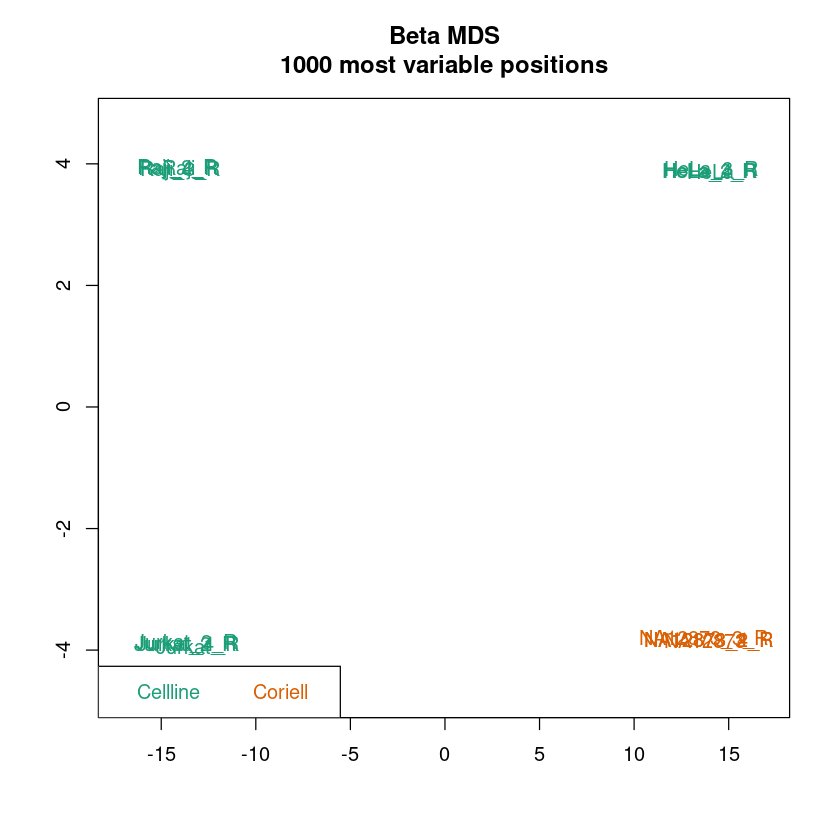

<< Plot densityPlot Done. >>


< Dendrogram Plot Feature Selection Method >: No Selection, directly use all CpGs to calculate distance matrix.



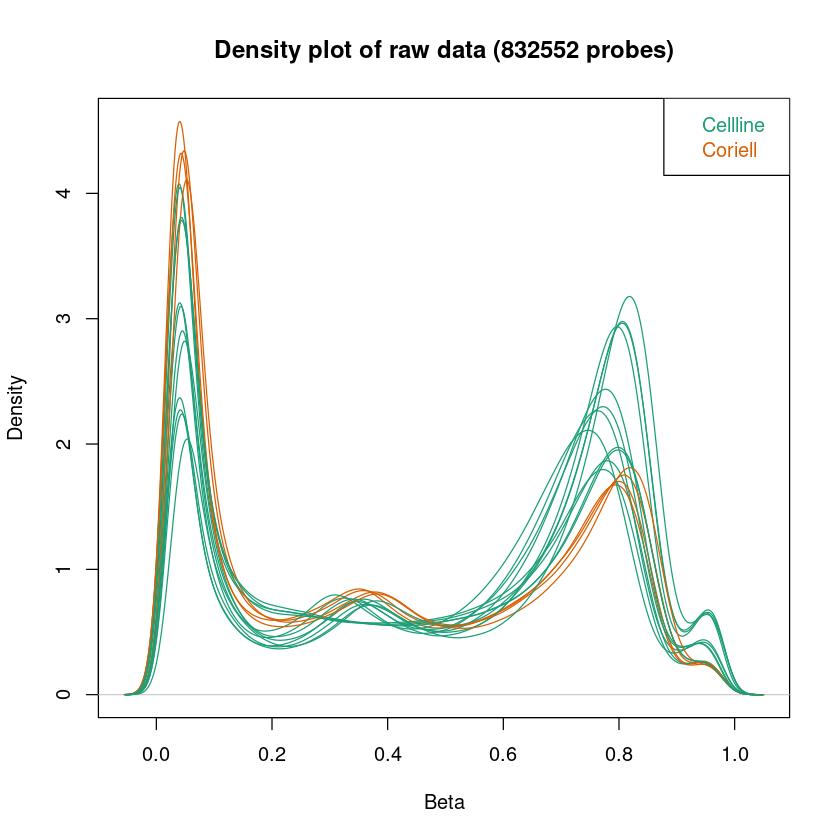

<< Plot dendrogram Done. >>


[<<<<<< ChAMP.QC END >>>>>>>]

[===========================]

[You may want to process champ.norm() next.]




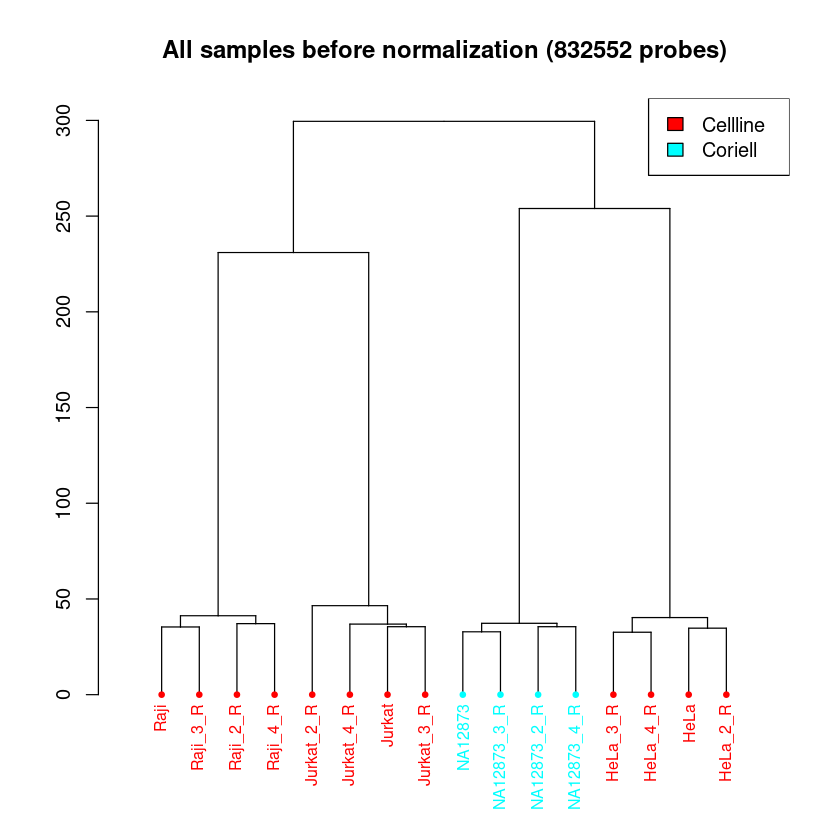

In [4]:
champ.QC(beta = myLoad$beta, # beta values stored in champ.load output
         pheno=myLoad$pd$Sample_Group, # what samplesheet column is your phenotype (where do u expect the major difference between your samples)?
         resultsDir="./CHAMP_QCimages/") # the plots will be saved in the directory this notebook file is located in

### Normalisierung mit anschließender Evaluation
Nachdem wir die Daten im oberen Abschnitt eingelesen und gefiltert haben, werden diese normalisiert, um die Vergleichbarkeit der Daten zu verbessern, ohne sie zu verfälschen. Dafür vergleichen wir den Effekt der Normalisierung durch PBC und BMIQ (unterschiedliche Normalisierungsmethoden). ChAMP bietet zusätzlich funktionale Normalisierung und SWAN, diese beruhen allerdings auf rgset und mset, weshalb wir sie an dieser Stelle nicht nutzen können.

Nach jeder Normalisierung nutzen wir erneut `champ.QC`, um eine Qualitätskontrolle durchzuführen. Am Ende entscheiden wir uns für die Normalisierung mit der besten Separation und der besten Badewanne (Density Plot).

In [5]:
# additional data needed for normalization
targets <- read.metharray.sheet(epicv2_dir)
rgset <- read.metharray.exp(targets = targets, recursive = TRUE)
mset <- preprocessRaw(rgset)

[read.metharray.sheet] Found the following CSV files:



[1] "../../example_datasets/epicv2/data/Demo_EPIC-8v2-0_A1_SampleSheet_16.csv"


Lade nötiges Paket: IlluminaHumanMethylationEPICv2manifest



#### Peak-based correction normalization (PBC)

[===========================]

[>>>>> ChAMP.NORM START <<<<<<]

-----------------------------

champ.norm Results will be saved in ./CHAMP_Normalization/

[ SWAN method call for BOTH rgSet and mset input, FunctionalNormalization call for rgset only , while PBC and BMIQ only needs beta value. Please set parameter correctly. ]


<< Normalizing data with PBC Method >>



[1] "Done for sample 1"
[1] "Done for sample 2"
[1] "Done for sample 3"
[1] "Done for sample 4"
[1] "Done for sample 5"
[1] "Done for sample 6"
[1] "Done for sample 7"
[1] "Done for sample 8"
[1] "Done for sample 9"
[1] "Done for sample 10"
[1] "Done for sample 11"
[1] "Done for sample 12"
[1] "Done for sample 13"
[1] "Done for sample 14"
[1] "Done for sample 15"
[1] "Done for sample 16"


[>>>>> ChAMP.NORM END <<<<<<]

[===========================]

[You may want to process champ.SVD() next.]


[===========================]

[<<<<< ChAMP.QC START >>>>>>]

-----------------------------

champ.QC Results will be saved in ./CHAMP_QCimages/PBC/

[QC plots will be proceed with 832552 probes and 16 samples.]


<< Prepare Data Over. >>

<< plot mdsPlot Done. >>




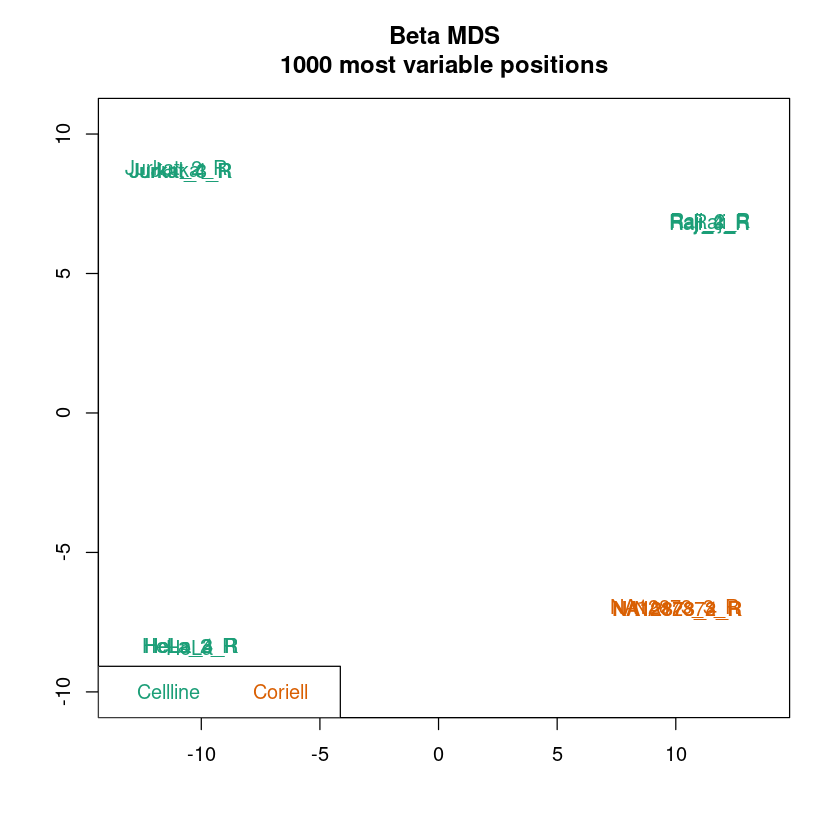

<< Plot densityPlot Done. >>


< Dendrogram Plot Feature Selection Method >: No Selection, directly use all CpGs to calculate distance matrix.



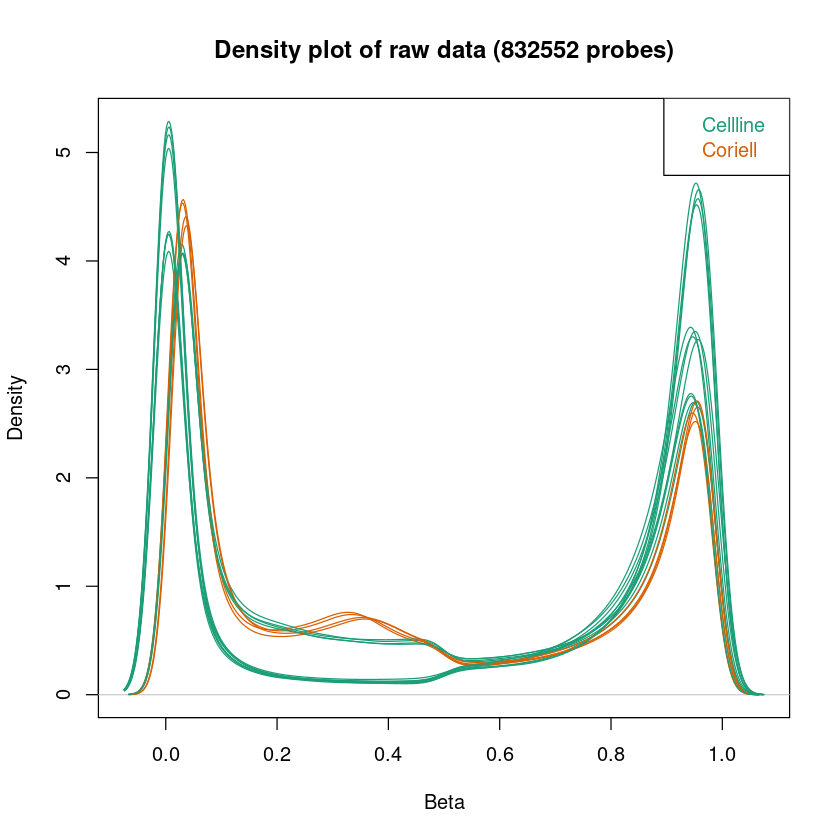

<< Plot dendrogram Done. >>


[<<<<<< ChAMP.QC END >>>>>>>]

[===========================]

[You may want to process champ.norm() next.]




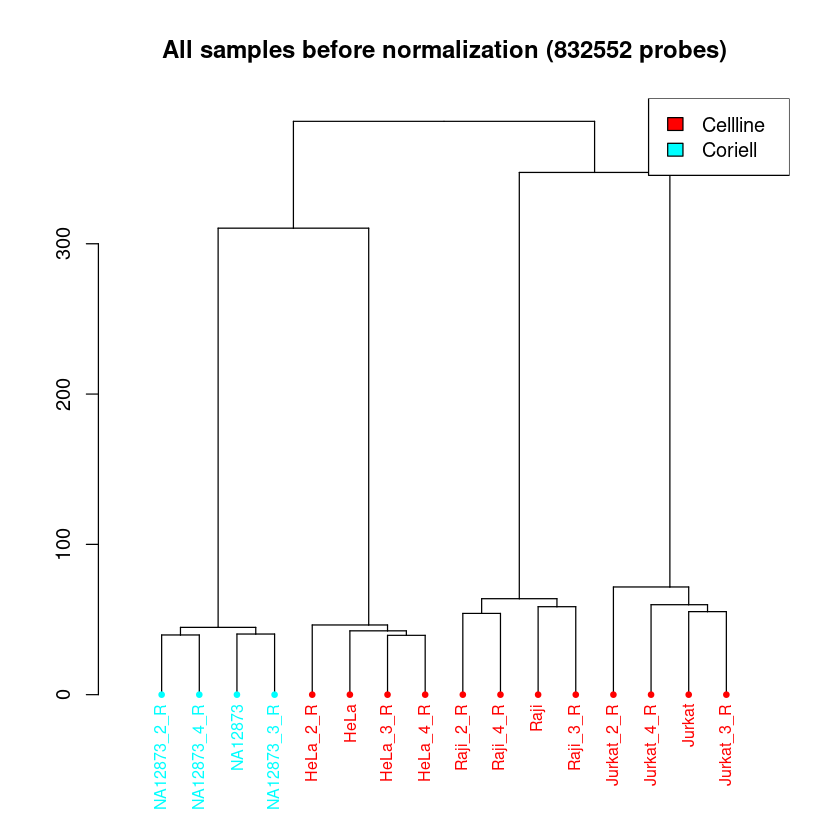

In [6]:
# start with PBC normalization
myNormPBC <- champ.norm(beta = myLoad$beta, arraytype = "EPICv2", method = "PBC")
champ.QC(beta = myNormPBC, pheno = myLoad$pd$Sample_Group, resultsDir = "./CHAMP_QCimages/PBC/")

#### Beta-mixture quantile normalization (BMIQ)

[===========================]

[>>>>> ChAMP.NORM START <<<<<<]

-----------------------------

champ.norm Results will be saved in ./CHAMP_Normalization/

[ SWAN method call for BOTH rgSet and mset input, FunctionalNormalization call for rgset only , while PBC and BMIQ only needs beta value. Please set parameter correctly. ]


<< Normalizing data with BMIQ Method >>

Note that,BMIQ function may fail for bad quality samples (Samples did not even show beta distribution).

3 cores will be used to do parallel BMIQ computing.

[>>>>> ChAMP.NORM END <<<<<<]

[===========================]

[You may want to process champ.SVD() next.]


[===========================]

[<<<<< ChAMP.QC START >>>>>>]

-----------------------------

champ.QC Results will be saved in ./CHAMP_QCimages/BMIQ/

[QC plots will be proceed with 832552 probes and 16 samples.]


<< Prepare Data Over. >>

<< plot mdsPlot Done. >>




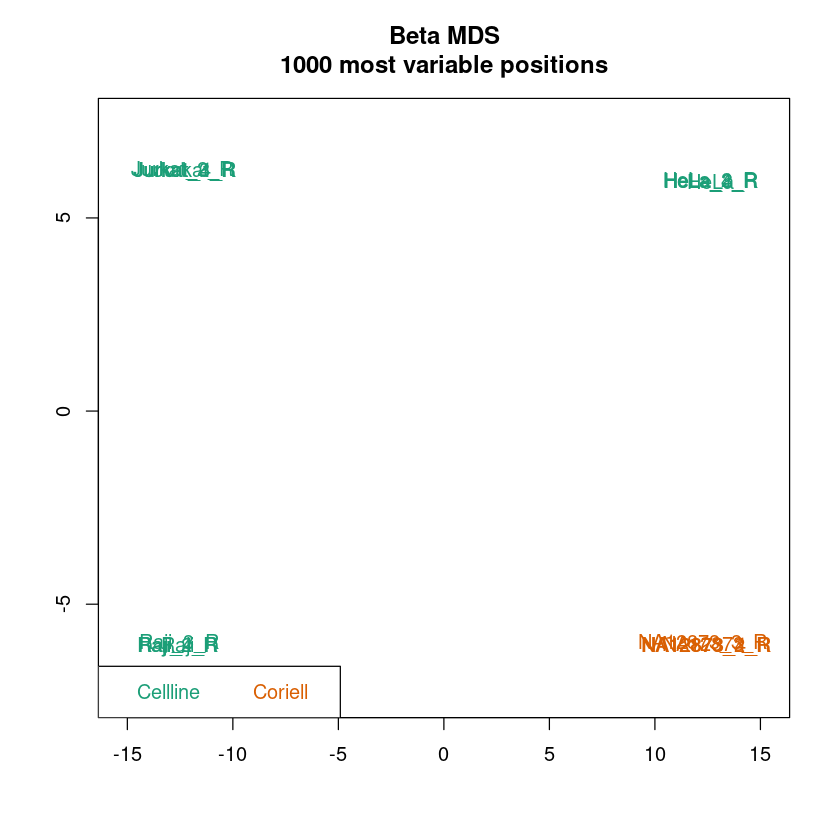

<< Plot densityPlot Done. >>


< Dendrogram Plot Feature Selection Method >: No Selection, directly use all CpGs to calculate distance matrix.



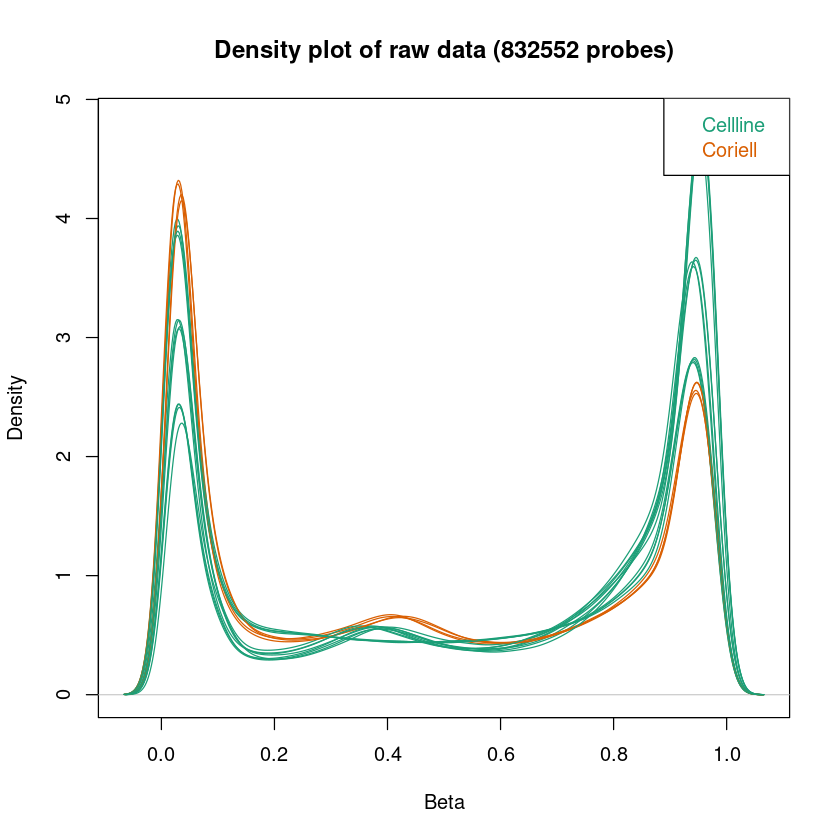

<< Plot dendrogram Done. >>


[<<<<<< ChAMP.QC END >>>>>>>]

[===========================]

[You may want to process champ.norm() next.]




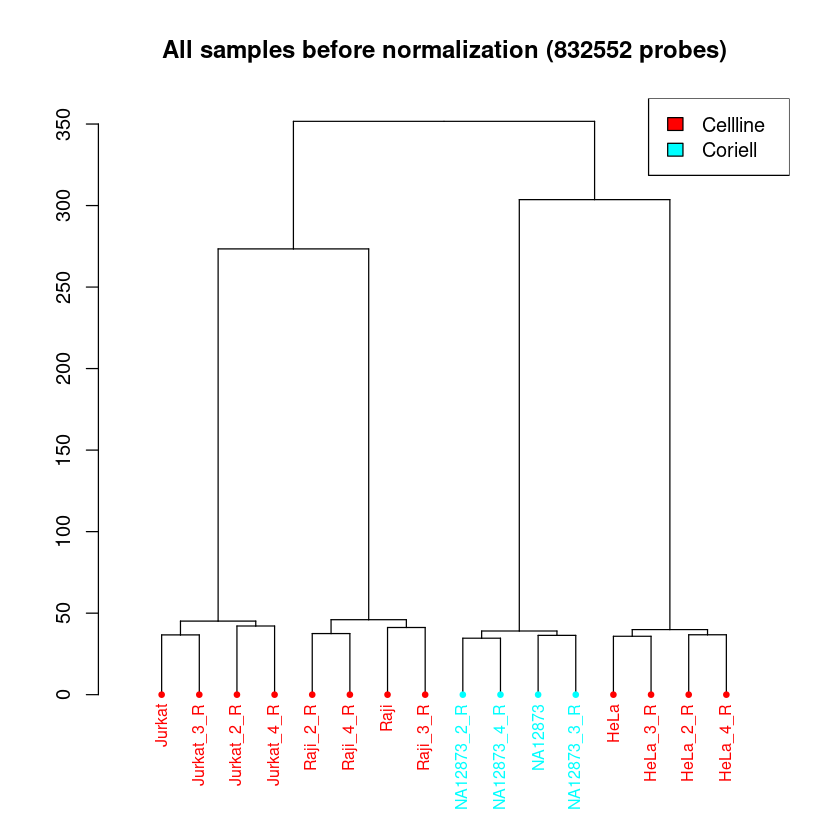

In [7]:
# BMIQ normalization
myNormBMIQ <- champ.norm(beta = myLoad$beta, arraytype = "EPICv2", method = "BMIQ")
champ.QC(beta = myNormBMIQ, pheno=myLoad$pd$Sample_Group, resultsDir="./CHAMP_QCimages/BMIQ/")

#### Subset-quantiles within microarray normalization (SWAN)

[===========================]

[>>>>> ChAMP.NORM START <<<<<<]

-----------------------------

champ.norm Results will be saved in ./CHAMP_Normalization/

[ SWAN method call for BOTH rgSet and mset input, FunctionalNormalization call for rgset only , while PBC and BMIQ only needs beta value. Please set parameter correctly. ]


[>>>>> ChAMP.NORM END <<<<<<]

[===========================]

[You may want to process champ.SVD() next.]


[===========================]

[<<<<< ChAMP.QC START >>>>>>]

-----------------------------

champ.QC Results will be saved in ./CHAMP_QCimages/SWAN/

[QC plots will be proceed with 936990 probes and 16 samples.]


<< Prepare Data Over. >>

<< plot mdsPlot Done. >>




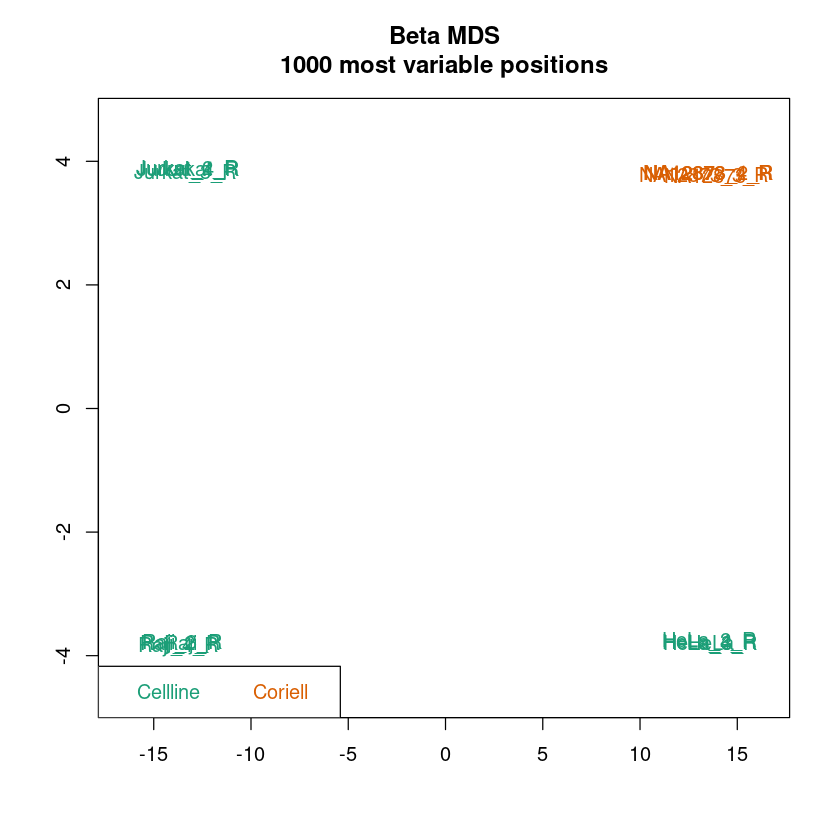

<< Plot densityPlot Done. >>


< Dendrogram Plot Feature Selection Method >: No Selection, directly use all CpGs to calculate distance matrix.



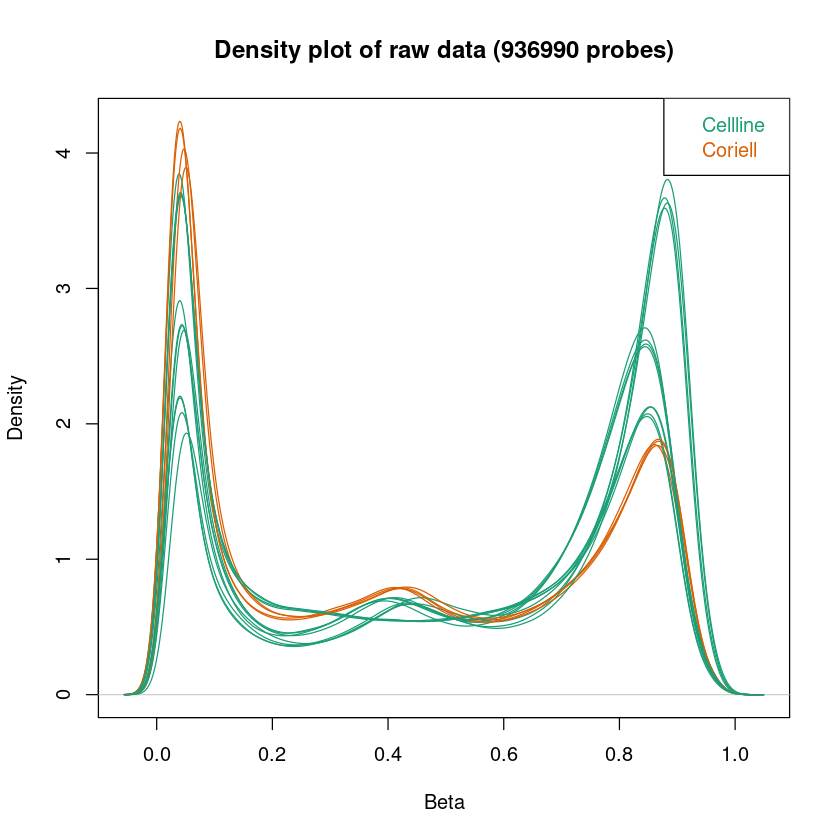

<< Plot dendrogram Done. >>


[<<<<<< ChAMP.QC END >>>>>>>]

[===========================]

[You may want to process champ.norm() next.]




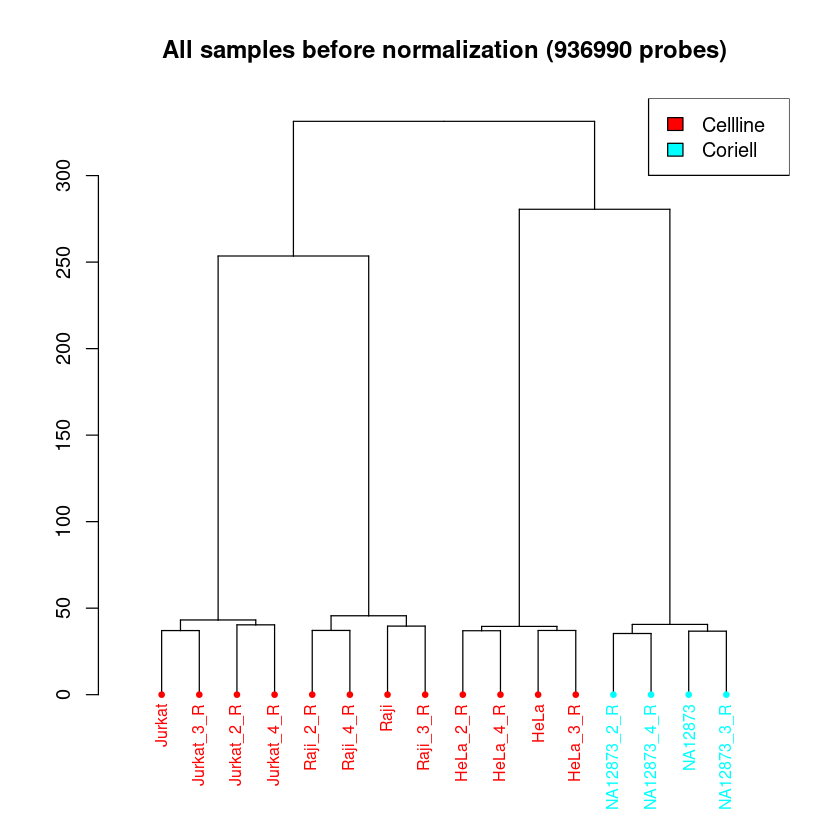

In [8]:
# SWAN normalization (no native ChAMP support)
myNormSWAN <- champ.norm(arraytype = "EPICv2", method = "SWAN", rgSet=rgset,mset = mset,beta = NULL)
colnames(myNormSWAN) <- targets$Sample_Name
pheno <- targets$Sample_Group         
names(pheno) <- targets$Sample_Name    # Echte Namen
pheno <- pheno[colnames(myNormSWAN)]   # Reihenfolge anpassen
champ.QC(beta = myNormSWAN, pheno = myLoad$pd$Sample_Group, resultsDir = "./CHAMP_QCimages/SWAN/")

In [9]:
# save best looking normalization result
myNorm <- myNormBMIQ

### Erkennen und Entfernen von Batch Effekten
<img controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABzMAAAClCAYAAADYpdD3AAAABGdBTUEAALGPC/xhBQAAAAFzUkdC
AdnJLH8AAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AAMAHwD/hJvKbwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kHFwopKYkS0Y0AACAASURB
VHja7J15fBXV+f8/Z+YuuVnISkgCBEgIBIIIsoRNoIJLq1VRKYoLgtbd1uVbl7a/VovVr7VWpSpo
Ub8WEVBwBSlWUJBdZBcC2QghZN9v7s1dZs7vjyTXRAg5E+Zm7k2e9+tF+zI5mTnL8zznc54zc4Yp
isLBGDgYJACMoV04AJUDDIB0jnJoLgeBchyAqgKyJFCOA3JH1+OACnTcFt50TejYFq3lGGvqyw7b
IlqugzYDgMLFy4mOM0fH4wIAXrWpXEf39nJANqCOqtpUTmJifiAzMZsV8SsuYDucN9sOE2iLBlvk
gv4ibGNqUxnyl87bIudN1wxof+FN9dQtdov6i2Ds9meMZ6L+0oEtahkXUVvU6vsisVtRO46LgWCL
orFbVOvoFbs1+b4ftI4KfXWbkbGbC/if0Von0P1FtI5GaR2fHgtwrSN6b0XjuklXrcPFbDEY1gb+
qKOwLYK0zvlqHS3+YpTuFvV9o2K3qE8bqnUEY7dRWsev/qJT7NaiI2idGrx5HX/pbj21jhZ/0X3u
5a3GD/r5QaD7i6IhduvV37x5caVrTl5nrePXHGMA53V6YuwOdK2jNSevpwbtbnmd883JS22CmAhc
rEjrwNQhAotdzpsu3FE9uWAdNbVZQ9cId6NgP4peVMt9uWBj9GyLr45Mx+tpua9oWYHA7utHLmYQ
3ABbFK6jJuMRLMp0CyVnTCx6jTN0tm0t99VityK2qCUm+8NfhOzGQH/Rewg12YQf5hjd/F5wPvCV
Yfp1IjfQX7jO8Y7rbLP+0DpCMYLr7ys9Uetwrk1HGKF1VB74WkerjXW11tG0xjFQ6/hlXtPZX6Bj
7NaqdTqMs83j7A+to+e4qKL+Z9A6Vev84o/YLRwiDIjd0OjTgax1hNeABmkdf6wL/KJ1mL627a+8
DusOeZ1gWacaldfxk9bhRvi0getUEa2jRcNoysnrmNcRjd3+0DrCuRADtY6mtYuBsTuQtY7v4eVA
1joag54RWsfwnLyOHdneuDBFUThjDAATNxiBpxJaGiF0Teh8PQ3lhNuiYx25BvviOvahpjYbNM5+
Gz+RcRG8nuE2prctBrpfkS0GZB391Y8BH7v1bgvF7p7h0zrbol/aYlCbRduiNS6SvwRg7DZo3vdX
7NZVt5GOCMg6qrzjp5CN1Dq8lYGR1une/tKdfNoorcNbVS5Q1+bBsjZoeXMm2HU3aR0dfZryOkFZ
x5Z7BnpeR1SPUU6+Y83IGPlLZ22i5QEBJgV2Xkf32B2AWse3mclEZzOCIAiCIAiCIAiCIAiCIAiC
IAiCIIguQKIuIAiCIAiCIAiCIAiCIAiCIAiCIAgiEKHNTIIgCIIgCIIgCIIgCIIgCIIgCIIgAhLa
zCQIgiAIgiAIgiAIgiAIgiAIgiAIIiChzUyCIAiCIAiCIAiCIAiCIAiCIAiCIAIS2swkCIIgCIIg
CIIgCIIgCIIgCIIgCCIgMVEXEARBEARBEARBEARBEARBEJ2lcedu8Npa6ggiYJBiY2EdexF1BEF0
E3ybmSoHGADGzv0HWsoBgNRBOd78r6NXRDlvLsfEyjHWVM9z3lewLc1NQQfFxNss2paWOnbUFsE2
+2OcRdsCAAoHZMFykgF11GSzAvcWHT/RtnDe9A9SYPuLyvW1Ra1tESrHxF5LN8pfOAdUGOMv/opj
usU7Uf/jPwZtFsj+0lw/PWM3dPYXo2xR79jtL60j3BbWfWK3YVqH6e8vemsdFWLzi1H+0nLNQNU6
PhsLYH/xhy36ResYFBeDYW0gGsfU5klaN63jB1tUOSBJBmodAd/XspY2SuuIrg2Mit1G+nR3it2i
awPdx0/rXBnAeZ3utDYgraO/v7iPZKHuX+/AcyQLBBEohGSOA7NaYbkgwy9ax185+Z6W19GcO+xi
rRMsOXm9dbfubdFhLW1qaajCAZNAh7QkQEQ6GQJOglaLMJF7iwgNVcTx+I91FE3cyYIGI5LoQqtB
7miBKgtYoaoh2EgaAqwsGBCFk2ca6gid6qiKLv44oEA80MlM0LYFAyJnzWPdkW+pYv7CRWwMgjbG
9bedloQvE/UXgbgjvPgTTE61JNlYV9uizv6iNXaLCg1VQ6JNOCEnGLuF/KW5rCwJ2JiG2M068Beu
xV/U5nI6+Qtvnoh09ZdAj93NviqiD/yhdURsUW22RSO0jlBb+I++T1qn81qH82ZbZPr6i2ibRRN8
Cg9wrSP4pKPeWkdL7G6JtSyAtY7oOIvERX/EbtF5n/tJ60DAHrRuKuq9ThX1F1U1UOuI9A3EH/Ay
Susoqv6xu6dpHe4nraP3OlU0r8MhoO+6kdbRZIvN+YhA1ToQjTvc2LyOyBNwwjbmB62jcu2xmzc0
AJzDOnY0TKkpYGYziO4F07AeNBq1rh7uffsBiYFZLZ3WOkbGbojm5bpBXoer4jl5w7QOxHPyPU7r
QH9/aS8nb2q5hywg3n1GKlBOEtliba64DMFyAoPmux7ruJwEsTpKgtFaxNlbl2NMrC2i5UTaIgt+
JVUWbIvo+EHQxrSW09LfIrOyUH+L+ovOtsiY+EduWxbjov6ip42JBNfOjJ9wWwRjiajNSjrbIjfA
X5hgHbXE7pZx7uo4psVfBE3Wb7Eborajp41JrYS5SBzTKUZosVnRGKH7uBiodSQtc6rOWkeTXxno
L3rO+0ZpHcaahHUgax3d/cUPupsJxgijtA5jgMT1tTG9tY7W+YUZoHWY3rpbZ63DGMC42ANHRmkd
LfHOKK2jZX4xSusAgEkS9ysjtI5WzW+E1pGlVg8KBKDWCYa8jpbYLRmkIxhr9pcA1jpMapqnAzl2
a8pFGqV1IOYvbcZPUaCcKoL54skI/9UNMCUl+H7Fm/9H6K0iLmY7Wt5AErEf0YfV9D4RxV91hMAD
rYz9+P96jEtLOYg+HKjnqW4/sQfXgUNwbd0O7vaAhYX5VevonpOXxPxPi9bROyevt9ZhEiDzwNY6
TLA9WrUO60FaR499JFNnxIue5UTLatiPEi4s3BaIG7Xu1/NHWwwaZ8kPQlrPcpLONmtoOQP9RTKo
jpraAuNskelYLmhit5HxrqfFbtE6Ghi7pR44vwRD7GYBHrs1xSYDtQ4LcFsMBj8ICh0RBP4S6Fon
KNYGUmDbmF/iooG62yitEyx6o1utDWCgv3STtUEw6AjJQK0a8PmaYMmZaPQXzjm4xwMAbTYye2pe
J9D9hTENZYMh3v3072wh4M07tUyWe3ReJyhsNsDnQMaCJK8TDFrnPG1R9EFJgiAIgiAIgiAIgiAI
giAIgiAIgiCILoU2MwmCIAiCIAiCIAiCIAiCIIhOwTn1AUH2SBCEf6HNTIIgCIIgCIIgCIIgCIIg
CKJT0N4REVD2SAZJEN0S2swkCIIgCIIgCIIgCIIgCIIgOgWjLiDIIAmC8DO0mUkQBEEQBEEQBEEQ
BEEQBEF0CkabR0QAIZE9EkT39G3qAoIgCIIgCIIgCIIgCIIgCIIgCIIgAhHfZqboUdKci507LVpO
C6LXM6qOQdGHQVJHPe/dY/uR61euR9si+QvFboo5FLvJX8hfyF9I65DWIX+h2E3+QrE7YP2lJ9oi
+Uv3j92gmENah/yFYjfZYo/XOkHbh6ra9E/nOkotN/QoHTeEc8DLAVWgnNL8ryNUDngE2qWoTdfj
AtfTUk4VqKNXbfonVEdVv3tzaKujUDmlqVxHRRUOKALOpzbfW8Sw3YpYOY+CDs8257y5zSK2CHFb
dCti5byKhnEW9BfVAH9pKae3LSp61rHFp0VsUTDIugX9xdNss1ykzQKTQYu/iOASsMWW2C3kL1x/
f/GI+otqTOxWNMRur0Gx26OK9bdX0eAv0N9fhGM3xGJEh7aowV+4YOwmrSNgO37QOiK2qMVfAl3r
uAS0DjdQ63AEvtZRuAbdTVrnnLpbb62j6qh1eHfTOgbG7kDXOoauU7kf1qk6ah1Fg7+Iah1vD9U6
IjFZU+w2SusoQZDXEdTnQZHX0XGdqjWv4/WDvxihdbwG53V4AGsdQ/M6vBtpnSDJ6wS61nHpmZPX
qnUEN8P0XKf6w18Ug7QO15KvCZS8DufgHg+4x3PGH5+vv5iApnPNTazjb+MyBsjo+Bz0lnIiu7yi
Z1hLUtMFO6xj8zU7qmPLfUVuLwsexiuzpgsywTaL9KMEsXPnRdrc0hYmWEfhcpLYvU1ayonYoqSv
LTLWdG8hmxWso6TBX0RgaPJVvfxFYk19I4naInS0RQ3+wiDm00zQqc2SWFtMkliM0uRXgvHELInb
rGGxW886+iF2t/iBnraot7/ITDwu+sNfhO7N9I3xIm1mGvxFNHYb6S+sxc4CWOswiPW33lqnxa+E
/UBQtxmldcySmH0bpnUQ+FpH77WBv2I3DNQ6ov4i6VhOq1+J2KJhWocDXLCOsmgdYZDWgf62qLu/
CMZuTVpHR7/SvE7V4C8i2oBLYrYoqnVkkXWOP7ROsx8EdF7HD7Fbb60jS0GQ12GC9hDgeR1Rf/FX
XkcO8LyOcOw2WOtQXqcL8zqgvM755nX8Eruh3zpV1K+YVq0jGBj1XKf6Q+tIgmtVvbWO1py8nlpH
dA48Q+swBma1nlfsbs9fTJoTB4LlRJxOyzVFNyn0vq9ocAXEP3bNNNyX6Twuuo9zN6qj3m1h/rAJ
LTaro7/4Y5yZgbaod4yQyKcDN3Yzff2vJ/qL7rYodSN/EbUJDbZjlL9IBs5XFLuDt44MBmoYA7UO
64mxW0sdpQCvYzeK3f6wWd39BeQvwR67dfWDbuYvZIvBm9fxR56oO+V1giJ209qgy2Io5XUodgdK
7DZU61DsDoi8jmjsJwiCIAiCIAiCIAiCIAiCIAiCIAiC6FJoM5MgCIIgCIIgCIIgCIIgCIIgCIIg
iICENjMJgiAIgiAIgiAIgiAIgiCITqFy6gMigOxRpT4giO4IbWYSBEEQBEEQBEEQBEEQBEEQBBH8
MOoCguiO0GYmQRAEQRBED6O2thYej4c6giAIgiAIgiCI80aizSOC7JEgCH/7NnUBQRAEQRBEz6Gh
oQFFRUVwuVzUGQRBEARBEARBEARBEETAQ5uZBEEQBEEQPYgTJ07AbDbDbDZTZxAEQRAEQRAEQRAE
QRABjwQAHIBbAXgHH2vmALwqoAiW8wp8/FnlTWVFynnUjuvYcr2OPjzNBcsBgCLQZrS0WW1q/zmv
13xv0bZ0dD2Opr4RaYtHEWwLb2o3BNriEfyoslsRLyfUFsFxUTTYokegjry5nKi/iNqisF8JjouI
7Yj6i6rBX7SUU7T4C/T1F871s0Vhf1HF/IUL+ouW2O3xQ+z2GBi7RdqiaBgXf8RuPf1FNN55uXhb
PIL+4lY6Lqc5duvoLyoX9BeuTeuoOmmiTmkdP8fu8vJy9OrVC1arFQDgbGxEaXllwGsdrwato5LW
aX8+UARt0QCt09p2AlXraLFFQ7WOEthaR9RfjNQ6ShBoHa9KWkcPreMxUOsI6W4EvtZRNGgdo2K3
lryOYoDWgYbYbZTWEV2nGql1FB4EWsdPeR1uoNbRM3YL+4sa2OvUQM/r8CDI62ixMaO0jqacvKot
J693XgcG+YvQOtWonDy6V05e4YGtdbTk5NvTOiag6Zu4ssBZ0gxNZ04zncq1VFwSvLdQHVnTDq3I
0dgidQQASfD91ZZ2dHRNCQBnHRdkGvuGMbG2CLUZYp0oQey+nAMmwX6UBcdFtBxj4t99lkXqyLTZ
BBO5HsT8Smbi48JZc5RgXevTkqgtavQXverYMs56lhP1F8YAWcRwBP1FS+yWNfShlngnGpN1i90a
/IUJ2qJojPD5lagtMv38RRYdl+YKiPiVULubbVHPmCxrsB1ZIOYwJji/MGO0Tks/atI6XRC7WSvD
qygvh8PZiPjesQGrdcAF52gtus0fWkcWu7dhWkewH5lBWofzZpuQxMbFCK3DoMEWDdI6LXUUml8M
0jo8CLQO49rmjS5fp2rQEZq1jmDsFtE6soY1oBFahwGQZeO0DhO0RWGtI4nbrJ5aR2Jimwo+f+ni
2A0e+Hkdn78I5nWM0DrQ6NNGaB3GAlvr+GzCD1pHT9/XqnU6HGdBrSOqiVr8Rdf8j47r1GDI6zAN
7TZK63AEvtbxxbEgyOvoHbv11Doc+ubk/aEjZEGtY3ROPpC1DnD+eR2T5gvpneiGvkFJ7+sJaj9t
bfbDJpywwTBj2gJ/GDUzzmZFJ3umYzloLMcMKifqM0b5C9Pg07JRNqb3Brwf6iha1kh/kWDMuPgj
LhplY8Fgi1psx7D5RTJmXNorxzmHqv74SOHp06cxND09sGO3hthkqNYJdH/RMFcaEbs16fNzlFUb
KtCw4R9wH9uK8KuehPWCn9PagLSOX2O3jK73g6DQ3TrrSord+sTuoMjrBIEtGtUWI7WO8CaOkbFb
MDAauk6VAt/GgkLrUF4n4HzfqBy/obHbD3WkvE7gaR0tupu0TgfjfJ6x2wQD0dLJRHBDY92Dxpq6
gCAoLlIfBjSDBg3C8ePH4fV6kZiYiLq6OtTW1OD4sWOIjIxETU0NysrKIEkSGGOQZRnp6eno378/
JIk+t072GNg0bHgRzu8/grc4C6qjBra6MuoUgnQ3QRAEQZDuJgiCfJoIckzUBd0Tb4MD5d8fgCUi
HLGjL6AOIQiCIAgCANCvXz9IkoTy8nIUFhYiJycHiYmJiI+PR01NDfr27YvMzExfebvdju3bt8Ns
NiMpKanNtUp37EHB2g1orKhE6o2z0PdnF1MHE4ZRv/avcGx6HbyuFGE/fxzWC6+EqU8adQwRkLiO
bIRSXQTr8BmQo/tShxAEQRAEQRAEQZwD2szspjScLsbmOx5EZFoqfrZsCUJio6lTCIIgCIKAyWRC
cnIykpOTAQAulwvDhw9v963L8PBwjB8/Hrt3726zmXl60xZkvf0+KvYegNfZiD4Tx1LnEobh2PoO
nNuXQa0tQcTVf0LoJfdBiuhNHUMEJK5D61H34R/APA0wxafSZiZBEAQR9HBOfUAEDirZI0F0S2gz
s5tiDg9D/PjRqMnKxYnP1yP99rnUKQRBEARBnEF0dDS2bNmCMWPGwGazoaKiAidPnkRjYyNCQ0Ph
crlQW1uLrKwsWK1W2MwWWI7nofSjL1CddRwhsdFIu20OkqZNoc4kDMOdvQ1KWR4irvkzQn92H6SI
OOoUIiBxHfoP6t7/LeS4QbCNvhOm+FTqFIIgCCLoob0jgiAIwt/QZmY3JTQxAaOefATrr7wRRes3
0WYmQRAEQRBnZciQISguLsbevXvhcrkQGRmJxMRESJIEVVURGxsLu92O8PBwjB2Sjv+++gYKNmxE
nzoH+s6chgG/vAK9L7oQtj70FhxhDA3f/h9cx76FKSkd5rTJtJFJBDT1H/0RvNGOiOuegXnQOOoQ
giAIolsg0TfvCLJHgiD8DG1mdnMYAE4BnCAIgiCIdrDZbEhJSUFKSspZf+90OnHy5EnEqRxHlrwD
9b/for6hARffPheDZl2FXqkDIZnN1JGEYXhzt0GtPIGw2f8LS0omdQgRMKjVNSj91W3wZB8HB2AZ
nArzZAUh4+dAikqiDiIIgiAIgiAIghCENjO7KYrLhbr8AkgWC0Lj9XtTIqfUjfwKNwbHWzGoNyUu
CYIgCKK7o6oqjmzajP4nilG9cw9sSYlInp6JobfPRWhiH+ogwngbdTkAxQM5Ih7MGk4dQhgOV1V4
s3NQ/PNZ4B6P70NiSulBIK8KvWa/Qt/JJAiCIAiCIAiC0IAENJ1r7lU7/lhzSzlVoJyiAorAgemc
i91b5YCXC5YTaQtvqqPIB4GV5rJC5TRcT8+2/HRcnKXlOPzPN2FL7IOUX13j+7mXN5Xz2O2ozy9A
TVb2Wa/pPUubT1a6sfjrSvzvugocOtXYVEe16d4ieBSxD4J7VLFyXrXp/h32t2AdW9oi6ge6+QsX
8xdfOUHbEbFFVdAWtfiLVxX3Fy3+xyHoL9DuL+22hYvboqLBxkTioqgfeHS0RWiI3aqfYreqky1y
/qN96xW7VY2xW7S/RW3RKH/R0xY1xQjR2M21+YERWkeLvygGaJ3W88sZv/MqOP7ZetR+tQXFm7cj
5qILMeiueRgwY+o5NzL9oXVE5w2vhnKBHLs1ax0R3Y3A1jq+eagTWoczCWDsvLSOpnmom2gdo2I3
1xC7PQbFbkXtvNbh9fVNG5lud5tfSGkVgMmJ6mee0yV2e5Ug0DrcP1oHOvsL7yb+4g0CfxHVOore
WsfovA7EbCfgtY4S2FpHU16H668PFJ3jmN55Ha8Gf9EzxuutdYDuFbuN0Dqc+y8nr+qZk1eDLycf
iFon0HPyhmkdjTn5QNY6ra+pe+zm+tni+fqL5jczRU8sZUz8gkywPOMdV4BpqKOmNjMd+wbNR7/q
2BbGfuxD1aug4XQJ6rNPIH7SOCRMmdAmijjKylH05Vc4/n8rYS8swk25e8/a163HpM6pYtXuOhwq
dGH22EhMGRL24/gJfuW7nRzTefWj0LgwiCkhptF2BTKGTINTMQ0GKVRH3tRsxnT2BRFbNMD/0El/
6XD2E7RZoetp8Remn79ojSWci/sWE4ljGmI3E2kM1+ArojFZR0dgWvpcQx2F447O12QMus+BTM/Y
rcWnDdI6nOsbd/yhdc5mix57A06u+xJf/XMJoqvrMfDnl2LIrTei0NuIhMheumgdaGyLXnrxbFon
0GJ3p7QO69gWoWcd/aF1tOgxDtj/+wrc2VsRfvkjsKZPP2/fZ3oGCQO1Dvxgi0bEbtEx0VROQOtw
/uO4aNU63N6AoszpTRuZPy1rVpvio8OpizDREnOM0Dq+mOMHraO7T5PWOS+twzTGbhEb49AXvWOt
Zq0j0u5O6MWjR49i7969GDJkCEaMGAGbzeZfrSMFttYR7keuQTOKrlO12o5gzNMzryM8X+rshP7K
66AHaR1N+R/RvI5gTt7QvA70jzn+zMnrsU71h9YJ9Jw8N0rrMO35CD3zybrjh5x8IGid1phabiZL
QjEOsqTfBOC7pkBZiYk7iaxjOd+9DSinqS2t/ttTV4/8j7+AJSoS/S6Z1qasq7gYu59ciMqDP8DS
KwIxGcPPes3W48w5sD3HiZ15ThRUeXC81IVeNknTuADi/S1iixC0RU22A8AkWk7ScfwgPs6SYFAS
bbPefgU0ve4t4v9+8b9O+Mu5MEniNqtnHYPBX/wSx0T9RdD/RMWVX2xM73Fmxthii7+wALdF0UWd
SdLRxjRoHUnSN3br7lcMkH6yYHKWluHEp+uRs/Ij2MvLMea6azHiznmITB2IE99/D6/X26V+5Q8/
8Ie/iD4laKS/SNDRD3TWOlp0REubvacOQKk+DVPfDEiRCV3jV9DXZv2ldQI5dmvqRwPq2GKDUids
h3MO1W73/beKtn7HALDoyPP2P83zi1HzkM7+0hNjt2gdDdU6RtqYznU0KnZr0bWtx/nf//43/vWv
f2HatGl47rnnMGTIkB4bu1viomHrVA1rZEnPNvvBr0TX0kb6S8DnGHX2Fwb/aB2ZGeQvGtrC9M7r
6B0jNIyzEVonGPxFyzrVCK0TTDl5dPOcvNR68Ijgw2NvwJezbsXJtRt8P3PV1CJv1ceITBuEoXfM
/fHn1TX4/i8voPrwUWTcvwCXf7Ycl3/2Xof3KKzy4tO9dbCagDumRmNbjhNj/pyNw6ca4fJwodfP
tdiYUbbIgsAJgsFPGQUTXfqQdSObIILcHoPAFlk36cNAid21x3Nx9O3lOPZ/K8C9CpIumYqht85B
5OBBgCTBarVClmXD6teT/KqnzoFa4B4XwBVAMjU9ckx0u9h9vnUsLi7G008/bUjcsXMVI07noVxR
frRZBkQ99kiX6kWCYjfNLd3Xxnbs2IHq6mqsX78excXFNL9QLCF6oNah+E3opRmpu6lvAh1a8Qcx
qteL7fc/hpqsbPDmHUXV40F9fgEskRFImn5xm/IH/vYqijZ9iwsf+w2Gzr8ZITHRHd6jpNaL/1lV
jO25TlyaEYHHfh6Hbx4fiAv6hmD266ewbEcNqh0KDQZBEARBdAPKdu7BkSXvIH/1Z7BGRWLo/LlI
/NkUhCT28a0k7Xa776l/j8eDwsJCHD58GD/88AOOHDmC7OxsOBwO6kyiaxaVEi0riXNTXl6Ol156
qesW2BYzIn41qylechUqOFY66rC4vho1DIDZAhYWRgNDEMR54/F44HK5EBERAa/Xi6NHj6Kuro46
hiBakZubi+effx5PP/00srOzqUMIgiCCGBN1QZDBOQ4vehNMljHwyitQeeQYTOHhMIWFAgBcVTXY
/9d/wBYfh+H3zff9meJshKu2FlzxwhwRBtli6fBWlXYFz64txw9FbsSEScgucWHvCScuGmjDe/f0
x1OflmHTETsmpoYiJkymsSEIgiCIIKbqcBayl3+Ioo3fInbkcAyeez0SpkxEklnG2rVrMWbMGKSk
pMDhcOD7779Hbm4uEhISEBMTA9bqkdmGhgZkZWVh+PDhCAkJoY4ldMHr9cLtdsNsNsNsNvt+zsDa
2B9B/JSjR4/C4XBg6NChcLlcmDx5MpYvX+6/G1osiPrzHyAPTkXBwuehArBLDJMzJyCkzwFIVgaY
LDQwRMBRUVGB999/Hw6HA0888USb3zU0NGDXrl3473//i+rqasTGxmLy5MmYPn06bDYbjh49ivXr
18PlciEtLQ0///nPER4ejsLCQuzatQsJCQmYMmUKdbLO7NmzBzU1NUhLS0Nubi6WLVuGSZMmYeTI
kdQ5RJfDeWDW68CBA1iyZAm8Xi/Cw8Px6KOPBmQ9nU4nKisr4XK5oCgKEhIS0KtXL7/cS1EUuN1u
qKrapKcZg81m65SmdjgcKCwsRH5+PhwOB0JCQvCLX/zC8P5UOfkkQXRHaDMz6MQBx/F3V8JVXYui
r7fBXVuHUb9/BLEXXtA0IXk8qM07gaghqU3lFRVepxNZb/wfynd+Bzk0REEwlQAAIABJREFUFFKr
BFB71DhU/PXzMmw+1oDfXhaLuDAJu/KceOObasybwjFpcCieuiYexTUeRNNGJkEQBEEEPa7KKriq
a5E4dRJSb5yF+PGjYQoNhRXA7NmzsW/fPqxduxZ5eXm4+uqrcf3116O2thZms7nNQtvpdCI7Oxt5
eXkYPnw4dSyhC6tXr8avf/1r/OY3v8Ff//rXVtpYDdzsGREQ9O7dGxaLBZ9++inS09P9f0PGIEVG
ImLBPIy88uewZAzHn3ZuQ0Lfvqj83/EIybgUckRvGphuSn5+PtatW4fdu3fD7XYjIyMDs2fPxtCh
Q8EYQ1lZGV577TXs2bOnzd+lpKTggQceQGpqKlatWoUjR47A7XZjzpw5GDlyJCwWC7Zs2YKDBw/i
hhtuQEJCgm75BafTiWPHjmHNmjVYvXo1kpKS2mxmulwubNu2Da+99hoGDx6MjIwMFBQU4K233kJ9
fT0uueQSfPvttygpKcHw4cOxb98+xMXFITMzE9u2bcPBgwcxb948Mg4/sGTJEhQWFmLUqFGIiIhA
r1696AEfwjACVY1VVlbi1KlT4Jzj6NGj4Jy38ROHwwGn04nc3Fxs2LAB2dnZUFUVt99+O2bOnAkA
2LVrF3JycmC32zFy5EhMnDgR5eXlWLZsGd577z04HA5YrVYsWLAAv/3tb1FVVYUtW7Zg/fr14Jzj
zTffBADU1dVh+/bt+Pjjj1FUVATOOT7//HNIkoQtW7bg+eefx/79+1FfX4+//e1vmD17NhISEmAy
nZm+r6mpwebNm+FyuVBXV4c333wTjY2NiIqKwpYtWwAAOTk5+Oqrr3D48GEAwKuvvgoA2LRpE554
4glkZWXB6XRiwIAB2L17N3r37o1vvvkGK1euxIEDBzBp0iS8+OKLAJo2hZcuXYrNmzejtrYW999/
Px577DEUFBTgnXfewcqVK1FaWorExETs2LEDb775JiwWCx566CHYbDYySIIgdIE2M4MMxhguePhe
OMsqcPiVxVAlhriRwxASG916RQJV5fA6nKjOOoYDf/snyr/bB9lsxsQXF6L/FTPOeY8Gl4rfrSrB
l4ftuHCADb+eGg23V0VyrAUffFeH57+owOiBIXjq6ngkRplpUAiCIAiiGxA1dDCGLpiL0IQ+6DV4
UJtTHEwmE8aNG4dx48Zh+/btSEpKgiRJiImJgaIoaGxsBOcc1dXVKCkpQVlZGfLz81FXV4fk5GTE
x8efdRFOEML5CM6hqioUhT5vQGij5Ru/u3fvxubNm5GUlIRf/vKXfr+vFBKCcrcLLrcbV944BzU1
NVg1qRQXzb0BUhhtZnZHioqKsGTJEpw8eRKTJ0+G2WzGN998g6VLl+Kuu+7CkCFDUFVVhR07diAj
IwPTpk2DJDV9+ScyMhLx8fE4fPgwduzYgYsvvhh5eXnYsGEDEhISYLFYsHz5csycORPh4eG61bmy
shKLFy/GkSNHEBsbi5EjR6KioqJNGbvdjuzsbMTHx+P+++9H7969cfToUSxatAhfffUVRo8ejeLi
YqSmpmLSpEk4ceIEsrOzYTabceDAAUybNg2DBw8mA/EDWVlZaGhogMfjQUxMDP74xz9i6NCh1DGE
IQTiNrrH44HT6YTNZoPVakV2djZ27dqFCRMm+Mo8//zzWLhwIaZMmQKHw4H9+/dDVVVMnjzZt5m5
du1avPfeeygoKMDDDz+MiRMnwm634+DBgzhy5AgURUFERATq6+sBACUlJVi9ejVWrFgBAL7NzOLi
YnzyySf48MMPUVtbC8aY77Nhn3zyCfbu3Yu6ujowxvCXv/wFr732GjZt2oTk5OQz2pabm4tZs2Yh
NDQUd955Jw4cOACPx4O4uDhfmfLycmzcuBFr1qwB59y3mXny5EmUl5fD4/Gc8Vbm9u3bsXnzZhw7
dqzNtTZt2oRNmzYhOzsbiqL4jrQuKytDYWEhzGYz+vfvj8TERJSWluKFF16AyWTCPffcY8hmJj3X
QRDdE8oqBZ06YEi79VfgiorT32xBxQ9H0FBegTjfrxm4xFGXn4sPhk0AJAYmyUi58Xpk3HM7wvv3
PeflvSrw6sYqfJfvxG1TovHFgTr88qWTeO+efrigfwhiwk346ogdS7dU46mr49u9zrT/LYDNDPzn
0QE0ZgRBEAQRBNgS4tE3Ib7DctHR0di2bRsuuOACWCwWVFZW4vTp03A6nYiNjUVsbCwYY6itrUVS
UhJycnIAAElJSdTJRKfhnGPMmDGIjY3FSy+9hOrqaiiKgstqDiCN3swkzsGpU6fgcrmwZs0aZGZm
Ij4+vsvrcOmll+Khhx6C+fVLwSMiAHq4o1ty4MABZGdnY+bMmZg7dy4kSUJ0dDSWLVuGQ4cOIS0t
DXa7HQCQmZmJq666ypc8ZqzpyOzNmzdDkiRkZGQgNDQU69atQ21tLT799FOkpKRg8uTJCNPxm6uh
oaGYPn06Jk2ahIiICKxduxZbt25tUyY8PBxXXHEFZsyYgZSUFJ8WCAkJAeccFosFsiyjtrbW94ZT
aWkpampq0K9fP0yePNn3UAGhL2PHjkVYWBhcLhe8Xi+io6NhsdAx1oQxBOLm0ZEjR/Dtt9+iX79+
cDqdyMrKwsaNG9tsZrbozOjoaDz88MOorq4GAEycONH3+5EjR2LGjBkoLi7GsGHDfGubp556Cg89
9BA455Bl2acxoqKicMkllyAlJaXNW6Dh4eEYP368b5NQkiTf719++WW88MILAIATJ05g9OjRqK2t
hdfrbae/f/zUwsMPP4xbbrkFnPM2D5D2798fN9xwwxkPlCxYsAC33357m5+1xOmrrroKo0aNgsPh
QGJiou/3M2fORGpqKpxOJxhjvn6YNm0apk2b1uZaLRvCdXV1vs1askeCIPSAVlHBKhJkCTM/+D98
MHwS8j78HAMub3rbkplMsIRHwlNTC2Y2YdTjv0HaLbNhElzw7M5x4L1ttRjU24SbM3vh3unRuOOd
Ilz29wK8f3dfDO5jwU2ZkUhPaF8gz3j+BE5WurD196k0UARBEATRzUhPT0dsbCyOHz8Ot9uNuLg4
jBo1ChaLBYqiQJZlcM4xdOhQJCcnIyQkBNnZ2bSZSXQap9OJkpIS2O12rFq1CmVlZairq4Pdbke/
i1WkDaQ+ItpnxIgRCA0Nxaefftrl946Pj4fFYsEjjzyChIQElNNwdGta3rLp27cvoqKiAAAZGRng
nKOgoAAOhwN2ux2cc2zYsMF3VN+QIUMwe/ZspKenIyoqCnV1dWhsbERJSQlsNhu+/vprlJSUYP78
+YiPj9f1GNHQ0FBMnjwZkiShsrLyrJuOVqsVqak/ru3r6+uxY8cOFBQU4I477kCfPn1w0UUXYfXq
1cjJyUF0dDRUVUVtbS3mzJmDiIgIMg4/8dprr6GxsRHXXHMNGhsbqUMI4iccOnQI33zzDQYMGICC
ggLcdNNNGDVqVJsyZrMZFosF4eHhmDVr1hnX4JzjF7/4BTIzM9GnTx9YrVZfbBw48OwiNCkpCQsW
LDjj53379j3rz1uu13LtyMhIpKSkIC8vr922McZgtVrBGMOAAQMwYMCZL5P069cPc+bMwZw5c874
2/YeMhk5cuRZv7t7wQUX4IILLhDq95ZN22+//ZaMkCAIXTEBTcdIqyogsXM/uSBaDvjxQ7tSB+U4
mj5z02E5DqgAJHRQR950TYaO28J5x+WApvui+d56tLmlHGPnPoaB8+Y6nqO/JbMJZVt3ouzAD+h9
YQasUb0w5qnf4fArb2LG8jcQ9pM3MRXefh9yDnx6oB4uhSOn1IOvjzbg3hkxeP+efrj73dO47tVC
HFyYiogQCVOHhvnawjkgN3fOZX8/ibxyF755YhD6RrfdK/dywCSw7vKqgCxgY4raVEaovzkgSR2X
42i6d0c2K+QvAuPX2hY7sh3Om+oo3GaI+RUXscWWsqoKgJ/1yaqWp8I4k5r6xih/kToup7JmP0DH
NibpbIut/aWjeCcL+Is/6ig6LkL+0my3Qv6iIXaL+AtnBsZuCM4vvOPrtcRuBp3HLwhsUaSOusdu
f2id5joGqtZpuR6YqL8wxMfHt/t2U01NDQpPFeGiiy4CR1My/+DBg+c3Vzb7NIOYv0gi/qc2t9kA
fzFK67T0T6Bqnfb8yuVyobq6GvX19RgwYAD69euHEJsNNTU1SIg6AMZK2k3uC2sdUb8SvF5n5hdJ
dE4V0TrN1+vpWodzjk8//RROpxO33norAGDs2HF48De/6VhHNMedzmodzjkWL16MhoYGjB8/HmPG
jMFfYksQycXWx8JrAynAtQ7EY7dhWocBIu8NdmSLAwYMgNfrxc6duzBufCbCw0Lx7bffIjs7Gxdd
dBEaGxt9b9C5XC5MmjQZKuf4csN/cPz4cTz55JMYPXo0tm/fjkWLFsHtdmPq1KnYunUr5tx4E9LT
0895ZHtntY7UzuRxNlusqanBxx9/jNWrV+OKK67AZZddBpvNhkmTpyAhMQmuxqY3n77//nv0798f
b775JmRZxvTp0zF9+nQwJmnTOoLrVKHYbeTaQGCu9GkYFthaRwHldfyhdbokr6NF6wjqbqO0DtBk
ix3lderr61FZWYmUlBRIkoSrr74al1xySYfzeWtcLhc+/fRTbN26FY8++igGpaT6XevExMRg4cKF
OHr0qO/hmJ/6i8lkQkxMjO+Nf639zZuNQeX653VSUwdj48aNqKmpQXR09Hn5i9KSBw1QraNJdxuo
dQI9dnMI2qIGrcNVY3LymvM6OmmdFt1tqNYRWKcK53XaGWdT68YK5D9+7EABQ+ACwcZnDKIJbCZm
/B0GkVZGKAvUsSkL2fG9oaEPZZy7Pbx5XNqrn2w2Y+Qj92L/3xbh0N9fQ9zoERhw5WWIG30hnGXl
+OHVpRj//J+FE+fPri3DZ/vq8eSVcZBlCX9fV44aJ8d9M6Kx7Nf9sGRTVfuTM4Ar/5GP7FIPNj2R
guRY81mFNJfEHE9kMakCkERsggsNX5NNQHBRIOgvqoC4am2Lwv6nVwK7ZbI4hy2qqgpF5VBUjiWv
v4Y33liCvLw8eL1eqKoKxhgkSUJ8fDzmz5+PBXfehf79+sFsks751LAKsW8q8Ob/YefpL23Kqs3B
U6fkS0sdITihCSdLJH1s0dc3vOM+FN10aYknkogtCo6z1tgNgdjNBUWT7rFbMBGh8qY4xgTqKOIv
LfMpF+lHiG3qq4K2qGiJi3r6S+sFr06xmwv0eYt9QdBXNG3W66x1RG2R6aR1ZFlGo6sRZovV1/D2
jhfSEru1bDILbTShuc06xm6Vi+sII7SOyrXV0RCtcxZ/MZvNiIuLw/jx47F06VLYbDYozT5Y/6+5
aNy18ry0TmdiNxN52EKj1uE6zamt5wO9tI7usVtQ6/Dz1DoOhwM5OTlQVRWZmZm4/4EHoCj8rMnK
dm2ik+PicDhgs9lgsViwaNEiXH3Ntaj4fxkdj6FGfxHpIKO0DtewvjJc67Dz1zqjRo3C9ddfj+XL
38esWdciIjwcaWlpbb5xOWHCBCxevBgWiwVR0bEAYxiQ3B/PPPMM9uzZg5SUFNxxxx2oqqqCqqp4
8803MWzYcHz33XdY+/lnSExMxK9//Wv079/f71oHP9E6JSUl+Pe//42tW7di1qxZuPrqqxETEwMA
6NUrEheOGo3c7OO+N0rr6uoQHR2N0NBQbNy4EX379kXakKHatE5HtqNB63DBDJ+W2K1HXqdTsdtI
rdNd8jo8sLTO+eR1VD+sU7nog6WisbvZFrngBhIEbbGjjYrx48fjqb8sRH5uLo4cOYKQkJAzvt84
YsQITJo0CWHh4WeNTx6PBzt37oTJZILD4YDb7YFsNvtV64SFhWH27Nlwu92+o6N/qnXi4uJw2223
4cCBA53P6/C2Gyp65XUO7N+HfXu/x8iRIxEbG3v+WseonLwWfxHROoJtFtU6XKPWCeTYzVX98zqi
sVs0ryM6T2vO6+ipdQT9xW9aR6Ddwnmddtapppa6mAWsgAEwCZaTJTEjkJhY0lzvcoyJPZEAND8V
wATL6Xi9jtrCTDKG3XkroKo4/c1WHH39bdhPFGLIrXOgutyoOnz0jL851zjXOjlsFhmxETKuHhUB
zhU881k5jpU04vEr4/Dby86cgGSpyaB/+dJJHD3txVePDcTAWPNZDdIsizmKWRIvJ9TfguUYA8xM
zL6F/EXQxrSUk5lY35yvjbUknU+fPo2XX34Zy5cvR0lJyVmT0ZxzKIqC4uJiPPvss3j22WcRHx+P
pUuXtvkOzE8xdbG/dMb3RW3MpMEWRb8Wo8VfdLPZbhS7fQ+qBGDs7oztmHS+niSJiT/GAJOgLVok
ff1K1F+E26K31mEabMcgv9LqL0wnfyktLUVinz4wNS9EiouL2zxR7G9/MSp2i+oII7WOsO0YpHVa
6vhTW+S86VQIxhhqamqQnZ2NiooKuN1uJBcXIzpA1xBGax09bczsB3+xyDraYjvlqqqqUFpaCpPJ
hKKiIvz+yScxatSoM45bO1v9JMGY1964NDY2YvHixXC73bjuuusAADtvCsFopuM6VdIvdvvNFqGv
v/hD64jG7o60TmhoKK699lpMmDABlZWVMJlMqK+vR25uLqKiohAaGgqbzYbIyMg2fzdmzBiEhYXh
1KlTcDqd6NOnD/r06YPVq1fDbDZDUbyorqrETTfdhA8++ABfffUV5s+f36Va5/Tp01i6dCn279+P
u+66CxdffHGbdshS01ub27ZtRUNDAzIzM7F9+3ZMnToVVqsV+fn5OHXqFIYOHWpcXkdn3e2PtYE5
GLROgOd19Pb9rtI6552L1NmvRNfSmjQR02/8RG1nzJgxGDNmDJ5//vl2y/ziF7/ApEmTIMvyGXam
qirsdjtUVcXEiRORk5ODuLi4Nt+S9IfWWbx4MR5//HHMmzcP//znP89aLjExEZMmTcL48ePR0NDg
+56yaF6nxQZNfsjrfLFuLf785z/j0Ucfxfjx489PT4vGiCDIMZqCJMcY0LHboLxOyxuZIn0TDHtY
wZyTp29mBjnMZMKwu+cjbsxIlG7fgyOL3wGTJchWq+aPLHPOcVlaL4xKbJoA502ORmKkBQUVHvQK
aT88/ur1UzhS7MZ//mcAUuIt7dq46Jc9jPpGczB8HLqrqnjPPfdg5cqVqK+v79THusvKynDNNdfg
5ptvxu9//3vfh8GJ7mOLRA+yR+qCgCA/Px+DBg0Kirhz7NgxTJs2DWZz0ykNWVlZSE9Pp7hIftXp
sW5sbERVVRXq6uqwbt06rF27Fjt27EBVVRUWTVFwbQr1KNnY2amrq8PevXvhdrvx1ltvAQCuv/76
Djcz9Yg7LpcL4eHhkGUZf/rTnxAdakbsiX+SXuzGVFZWYt++fejbty8yMzMBAGvWrIGqqk3HY4eE
YOvWrcjKysL06dMxePBgAEBFRQWcTiciIyN9b+Dk5OTgP//5D2bPno3t27cjPj4e6enpGDhwIE6e
PKlbnTnn8Hg8UBQFTqfTd/qO0+kEYwxmsxl2ux2ff/45vv76azzwwAPIzMyELMuw2+2QZRnW5tzD
nj17cOjQIcydOxderxeyLMPtdkOSJKiqipCQEFpf9aD5hbqc7DFY2Lx5M371q19h0KBB2Lt3b5vf
OZ1O7Nq1Cx6PBwUFBaiurkZaWprQZub54PF4YLfb4XK5zlnutttug8PhwJEjR5CSkhJANt50ghsj
Yw+6mEMjRn0T6NBmZndwJllCfOY4RA1JQ9Zb7+HkFxshcQWeunrN1/ryWA3695EwPzoKoRaGy0aE
nbP8jYtPYu8JF9Y+lIzBfSzk2EFObm4urrvuOhw6dKjdTUyLLCOxVy+M798fs0aMQJ3bjU8OH8bO
ggLUNjb6/o5zjuXLl2PHjh149dVXccUVV1AH92AURUFjYyM8Hg/MZjNCQkLa/eB8d8fr9TYfT+PW
9Hc2m833tCXRs3A4HMjNzfXrZqY/FrAtREdHw+Fw0EASncbtdqOqqgpffPEFPv/8czDGYLVaYbFY
wFgjVCZ1fF430SOx2+1ISkqCoigoKyvrcrstKWn6nmuvXr2Q4dyLcFmhQenmGu+zzz6D2+3GPffc
A4/Hg1WrVmHgwIEYOXIkGGPgnOOjjz5CTk4Obr31VjDG8Prrr4NzjpEjRyI8PBwulwtLlizBuHHj
MHbsWGRnZ6OoqAherxe1tbVnP7Kvk1RUVOAf//gHNm3aBK/Xi9LSUtTX12P69OmIj4/H7bffjoyM
DHz++efYs2cPnn766TabkmPHjsWTTz6J+vp6bN26FWPGjMGFF16Iuro6pKWlYfny5QgJCcHIkSOR
kZFBRkKcN4ccJ/FW2deoUZwYGZqMO+Ono5ccSh1DnNd8XVNTc9b1udvtRnl5OR588EHYbDZs2LDB
98CmP2l5UKSjnEldXR0URenUSwj+xGKxICIiAlarlQyMIAhdoc3MboQcasPIRx/AD4vfQmNpGRqr
a7Qt9l0MlQ0q/vHfSiREm3DFiHCEWdvfnnzw38X4/oQL79+TjCEJVuGjU4jAZNmyZfjjY4+hsLS0
jRCSGEN8eDgeuvhizBszBrFhYb5Na6k5WX3H2LG+8+kfW7cO73z3nW9jMy8vD7fffjuWLFmCa6+9
ljq6h2G323HixAnk5ubi9OnTcDgcCA0NRUJCApKTkzFo0CDft3Z6ChUVFdiyZQuOHTsm/DeMMYwb
Nw6XX345GVUPZPfu3Rg+fHjQ1LflSFDfPCJJiIiIoIEkOk1JSQl++OEHzJkz58ejtpo1iPu9XwNH
v4RkMlNH9UC414XK/50B78nvEfPkt7AMGtvm906nE8eOHYPH40FSUhIkScKpU6e6pG6KoqC8vBxe
rxePPPIItlzHoUbSpnt3Ji4uDrNmzcI777yDefPmwWQyITMzE7fffjtSU1MBNG3+zZ8/H6tWrcLN
N98MzjlSU1Px+OOPY+zYsZAkCatWrYLVasW0adMQHR2NK6+8Es8//zx+97vfwe1248knn9StzpGR
kbjzzjt9RyG3xmKxIDExEREREXjhhRdgt9vPKNOrVy/07t0bMTExuOOOOxAREQGLxYKYmBjccMMN
mDZtGhhjiI6OPuN4XYLo1FrKa8fu+lyo4DjZWAEAeCDhMlgYpTeNXwMEZ70ZY75/PyU8PByXX345
+vXrB0mScO2117b7+Qw9CQkJQZ8+fTrMlYSEhEBRlIB7AzIpKQkTJkww9GHcYLVHgiDODc323QjZ
asXgudcBqorv//ICQvvEa/r7SrsXY/pZYbPJ+P3qUngVjisvDEe49cxF9wtfVODr4w78fW48Lky2
CJ+BTQQmCxYswJoVK1DvcvkS0CEmE9bdcQcmDRgAiTFIjEGWJKD5m1U+gQBAbvnqOud44cor8fjP
foa7Vq/G2qNHwTlHaWkpHn74YZhMJlx11VXU4T2EsrIybNy4EatWrcK2bdvQ0NAAq9Xqeztz3Lhx
uP/++3HNNdf0qH4pLS3FJ598gnXr1rX5udvthsvlgiRJsFqtMJlMbRZYd999N21m9mBfmjp1ahsb
Cg8PD9g3dWNjY3Hq1Cn0798foaGhcDgcMJlMKCwshNVqxcmTJ1FaWuo7eig8PBwjRozoksQAEZxU
Vlbi+PHjGDhw4BlJnWqLBV5rJJgcQh3V01C9qPjjCHgrChA+dQFMUWce+ebxeCDLMhISEjB//vwu
TfZxzmE2m3HDDTfg9ddfh/vZMYDiAjNZaOy663pcljF58mSMGDECTqcTABAWFoZevXr53uSx2Wy4
6qqrMHXqVN/xgVarFVFRUb4jZq+99looioKIiAhIkoTk5GQ888wz8Hg8kCQJ0dHRutXZYrEgNTUV
qampyCv3YNWuWuzOsyMiRILDDRTXNIDDDs4tANpLqhf59CpHFaJDazH/4ijMHher61ukBJHvKsd/
aw5jem0k5lUk4kiIA2+wg+gl23Bn/M+ogwwmWPeObDYbBg4ciL59+57xO7PZjOTkZDi/+hq1rywG
Ly1D6O5v/F6nK664AkOGDOnwONvMzEzDj/E+G7fccgtuueUWY+2RNjN71rJAVXHq1CkcPnzYt8Ef
Hh6OCRMmBJx/dCUOhwO1tbXwer3gzfn8pKSkoD4pr9tsZlZVVWHbtm3YtGkT8vLyYLfboSgKVFXV
tPiwWCyIiopC//79kZmZiSuuuCKo3iaQzGbETxgDU3go+l2uTcztzndg1kW98NJNffDg8hL8+eMy
cM4xc3g4osIkmJpfvVzyTRVW7K7DAzOiccnQcFhN9EpmMAf76dOnY+f27fAoPx579cCkSXhk2jQk
R0X53r78cYH6E5Eqy2CqCsgyoKowAYgPC8OHt96KOz/8ECsPHIBXUVBQUIC//vWviIiIwLRp06jz
uznV1dX46KOP8NJLL6G8vBwZGRlIT09HdHQ0GhoacOLECZw+fRqHDx/ucZuZcXFxmDlzJhISEtr8
/NChQ9i8eTPi4uIwceJEDBgwoI3vTZw4kQyrByNJTU8NuVwuFBUVoV+/fl2+mamqKioqKlBYWIjE
xEQkJSWdtdyoUaOwe/duqKqK0NBQFBcXIyQkxHfUbGJiItLT032bCmVlZdi3bx/GjRuH8PBwGmzi
DBhjaGxsxJdffomZM2e2efP3dwNOYFQvN1TQ8Z3dmY3uL5DjOQbOm9Z20VIcLnn6GSgV+YhbeBDm
pLO/vc45hyzLSEtLg8PhwF133dXlCYQVK1Zg5YoVOH53HAY8sBKm3qk0oN0Yi8WC3r17+/7762NO
/PuTUkgMiLbJOF7mhlfFT44EdDb/azFcNH+YqbZpruTAgDgzFt2cCLOsz9p7yzEHlnxTjRPlP36P
zaNw2BtVNHpU35G4XlX7tYtrvFj4WTle2lAJAEiOtWD+lChcfgHN8UGTJ+AqfnCcxMfVe/CzyBG4
OCI9IOp1ylWFo44i3LO3GrYX3sBFYy/ElEVzkd9YToMWCHotSOvUqsY1AAAgAElEQVQ9adIkbN++
vc3DxD/FW3gK7v37IWl8aaSz9O3b96ybq2foo40bA7JPa2trcfLkSYSHhxv2diZ9rjPwcTqd+O67
7/Dee+9h6dKlPm0kSRJWrFiBCy+8EEOHDu3wOgUFBfj++++xfPlyfPbZZ/B6vWCMISYmBosXL8bM
mTN1fRCsvTWHw+Foc4qFxWLx+33PRXl5OT788EO8/PLLyM3NhaqqkCQJ27dvR2pqKuLi4oLSboJ2
M/PUqVNYuXIl1q9fD5fLBY/Hg8rKSlRWVqKhocF3ZriWc8NbPlDc8j23jz76CC+++CIsFgvS0tLw
yiuvBHySzetoxKn/boGtTzwyHtC2WB+eYMXWbAeWbqnBP29OwMPvF2PhZ2X4+4ZKPPizOIxJDcMf
PyrGsdONGBBnwS9H90K4tWd+8647UFpaissvvxyHDh3ybfozxvDunDm4evhwRFitvkQza37zkp/l
4QCmKE3rba8XvPktGwlN39ZcOns2AGDF/v1QVBW7d+/G2rVrMXjwYCFhRgQniqJgx44dePvtt1FW
VoarrroKDz74IEaPHg2z2QxVVXH69Gls2bLF8OOmWmy/ZaOoqxYmCxYsOOPnS5cuxY4dOzBw4EDc
c889uPTSS8mYCJ9PtTxFl5ub63vLo6tpEejff/89Tp8+jbCwMIwfPx5Tp05t87aTzWbDlClTkJ+f
j4qKCjQ2NiIpKQm9e/f2PSXZ+knA5ORkSJKEH374AZmZmTTgxBm43W44HA5UV1ejuLi4ze8euTUZ
sEWDWeh7Wd2VlY53sMLxNrI8h6Hwpk3rOLkPJnrrEJFxGSTbueNhY2MjsrKykJOTg2uvvdZ33GdX
xMyQkBAsXLgQ8ZIbISf+CUQnAvRmZrfl2XUV2J3rhEf5cc1U7VBQWusFAJhlBodL7dTbS9mlLlyz
6CQYAAaGsYNs+H9Xx0HW+K2XLccasHhTFbJKXKhxqPAq7dWm86+0KCpHdYOC6oYmfy2u9eJYsQs7
ch24Y2o0+sfQseCBzhFnEf5S9DFKPXU40FCIw5GncG/CTEPrdNpdje31x5FsjcGFYeFwAbDKFowK
H4gVFTvwbf0xXBwxlAbPQIJ188jlcqGuru6c6yvOAC7LXdbIAwcO4JlnnsHgwYPx3HPPtauP16xZ
A4vFguuvv15Il3i9Xqiq6vdvWW7ZsgX33nsvpkyZgpUrV5I9dnOKiopw22234euvv4YkSVi2bBlm
z559zgcEFEXBpk2bMHfuXNjt9jb7NxEREbjpppswceJEbN269Zz3PnnyJP7whz/ggw8+8Nl4i71X
V1fj7rvvxtNPP40HH3zQb+1XVRUlJSVYtGgRXnjhBaiq6jutY9myZUhKSjpnX/iD8vJy3Hffffjo
o4/Qv39/pKc3PZRUWVmJSZMm4YYbbsDKlSsD7ohqEYJqM7OmpgYff/wx3n33XdTX1+P06dMoKyvT
9PZlR4FdURQoioLGxkbU1NQgPz8fjDHs27cPR48eRXp6Ot566y2/DPYPr7+NnOUfot/MaRiy4GZE
DOivPdlTU4PDi95AzIh0mMNsGtoOVDkUlNWpeHVjFdweFS/emIhb3jiFrTlO/HVdGUKtEmocXtw0
Pgr3XBKNxEgTTQ5Byrx587Bu3TpUV1VBbXWs7Fd3343x/fvDJElgrZawnHPfU3a+B4V/sszlaN7Y
NJnAOAdTVVhkGW9cfz08ioIPDh6EqqpYtGgRRowYgXnz5tFAdFPKy8vx9ddfY9++fZg2bRruvfde
jB8/3vd7SZLQr18/3HjjjYbXtbKyEjk5OZBlGYMGDUJsbGyXbmwShAgTJkzA6tWr8ctf/hL19fWI
j49HVVUV8vLyIEkSKisr4Xa7IUkSOOdITk7GsGHDzvrm5g+vLQWTTRi24GYwi7ZkoiRJ6N27N6ZM
mYLCwkLk5OTg/fffR0FBAW677bY2ZWVZxuDBg33ivr6+HlFRUZBlGXV1daiqqoIsy6ipqcGJEydQ
UlKCiooK5OfnY+zYsRg4cGCXC34icGk5FmfatGm477772vxuWO7bkGxhQHgf6qhuyKbG/+CF+j+j
Vqlp8/Mqbxns3I2km1+BHN3vnNfIyMjAvn37urzue/fuhdfrxc6dO/Gn2C2QvVU0oN2UZz8rw+4T
jcgpc6POqbR7tJ3b2/kNwkYPx6HCRt9/55W78F2+A//v6t7ITAkVWpd/tq8ez64tR1mdFx6l687f
8yocFXYvVu6qxY5cB+6aHoPrx/QiwwnUOZcrKPXUIky2YWHi5dhcl4W9jnycdFUi2WrcscEFrkrs
acjH9F5DESaVwS1JkGQZvc0R8MKLnfXZtJlJdIoNGzbgkUcewXXXXYdXXnnlrGWYJIN14bGMlZWV
WL9+PS644IJ2yzgcDvzmN79BRESE0Gam3W5HYWEhnE4nxowZI1yXhoYGFBYWwmw2IyEhQeh0IJfL
hdOnT6OoqIgMrBtTX1+P2267DZs2bUJ9fb1vX+XOO+9EaGjoOU9hKy0txT/+8Q/f37WmtrYWISEh
2LZtW4d1+Oijj7BmzRp4PJ6z/r6mpgZPPfWUXzcz8/Pz8dxzz+G9995DUlISYmNj0dDQgF27dmHm
zJlYvHgxZsyYoemaHo8HX375JZ599lnfm6Y2mw1fffWV0BGxixYtwrp165CWloZ3333X99D4+++/
jyeeeAIffPABnn322S57yFNPfFmin25QnI3WtnUusSxaTpSSkhKsWLkSK1esQHFxMU6dOqXpjcvz
hXMOu92OnTt34uDBg8jNzcXYsWPx4osvti3X/D8dtbm9/uk9dhQaS8tRuGETokdmIDQpEVJzIk+k
H7lXQV3eCZhCQ5B0yZSzl2mnjjuOO+Fwq3j00ii8u70az6+vwsrdtah1qrjvkijcPyMWESFSu23R
c1NTaz/qVU5T/QLYX87Vh7t27cL8+fORk5PTJtAP7d0b7910E0YlJUFu3shUFQXc5YLidII7neBu
N9B8nKwUEgIpLAySzQZmbpUMl6SmMpw3/T9jsJnN+NOll6La6cSXx4/D7XbjnXfeQUpqKqZMntJp
f/kpqspbVYMZMtZdbYuB6i/Hjx/Hnj17EBISgszMTFzUjlBuvWlolL8UFBTgtddeQ2FhIWbMmIHx
48cjLS0NSUlJsNlsAe/T5xt3elLsDnStc66Yk5ycjPDwcHzzzTc4dOgQYmJiMWzYMAwbNhyK4sWY
MWN8T9dyzrFnzx5kZWUhI2OE7+cMHEeXLsPBv78GyWpB7MgR6DNprKb6McYQGhaGlJRUZGVl4cYb
b4QkSfjkk08waNAgXHzxxWftn759+6KkpMR3zGzrxU94eAQuv/wKVFVVIT8/D1OmTMHnn38Ok8mE
gQMHNgl5ewOyli5D5cEjGPnQPYgZOfy8x5lid3BpHVVV4fV6MXDgQMxuPvWBA4DTgZq3VoGHRUKy
hgSNHguGuBMotvi6/QXY1fozfv6v1xvQq04BmNTuvRsaGvDmm29i//79kCQJEyZMwLZt27ukDysr
K7Fz505wzlFXVwdLhANgKjhvqifZYvDqiJ/W8Y63T2F3XiNqz7aJebanQNl5Tl4tc2ijigOFjXjs
gxIMT7Th9XmJkFj7l1m7vx7PrSvH6RrP2TdbNd6/MzS4VBwrdmPFjhrER8i4eEhYt7BFo+roL61T
6KrE2qq9GLulAIOXPoD49P74n99lYE3Vbjyc+HPDfLpBaUS8ORyzYsbBlHwQtpmXwDx0MNJtSbg8
ciTyGst6TF6H6qi9jufKIDudThQVFaGysrL9OZrzpt910fzCOYfb7UZDQ0O7/sI5R1VV1RmbOO31
YV5eHtasWQOv14tRo0YJbYhwzpGdnY3tO3bAbDYjvndvjBo1qs0ncc52b0mSYW112hvZYnBrnbPR
2OjCnXfeic8+++yMl8wcDgdefvll9O/fH6NHX3TWOhYWFmLTpk3nuH5j+/bTKnYXFBSgsbGx3TVk
y7H5/hznd999F2+//TYyMzPxhz/8AVdedRUO7D+A3//+Saxfvx73338/srKyhO9dXV2NcePGob6+
HuXl5W2O3x02bBiysrI6fAnDbrfD6XRi4cKFbU6/mjt3LtauXYtVq1Zh2bL/z957x1lVXvv/7733
6WV6ZWaYgWEYeu+ioiiWiCWWKLaINbkmV01i1Jiryc3va8xVU4xRYwwoKJYbRSM2UEG6NBEY6szA
wDSmt1N3+f1x5hymnDNnDwwMcM/n9eL14pzZZ+9nP89a61nlWWst5sknnzjjdB0x+Ee/njYzAsga
qEL06xRAz2E/RQO/GplwlyxZwty5c/mfP/yBb775hsOHD5/SQGZXId7W1sbq1av55z//yZw5c/jq
q6+OvYsKenJEVQLz03VF0qZMYMzP/4P4oYOp3bSN1sPlyDq1VJ8C7oZG1v/0URw5WYx+4Edhr/Mr
gfIIHeGVNR7+VxUCGkdbFOpdCoNSREwGgbvPS+Q/Lw4fyIQALeg9YOqR9V3nU/QRvi5abJ9rPWNU
NfDqbLfUG37RdPKLHtqR1cj80vVduvLfrFmzmDNnDnv37g0pO4IgcPfUqXw0fz7js7ICgUxBQJVl
1JYW/JWVtJSVIdfWorS0oLS2ojQ346+uxn/4MPLRo6gez7Hys0YjgqYFNj9RDC1kYUoKozIycLY3
XV6zZg179u7T9c6KFp5fuvJmY3MTpYfKcLldUe/pVfQVTvLrpAc5OMZo69IbflH6j1/0ym5fhAU8
cuQI+/fvZ8CAARQUDEUyRi9honFy+CVan5/ExERycgZS1X4q7P777+epp57i7bffZvPmze0Gjdaj
7O72LkHe17l+qqbvXbRe8Es0mugNLXp7QYv0IS2qOmW3plN2n666Ttd3CUezkiSRmprKpZdeysyZ
M7ngwguZMm06iclJpKWldSoTJAgCEyYEDIbyivLAGGWZopcXsuOPL6JqKvFDBiNaO/OlX43+Lpqm
0dDYzAcffsgLL7xAcnIyY8aMweVysWvXroi6TkAWFGC327FYLKSkpFBQUMCMGTMYNWY0Hr9MQ2ND
qAfnFVdcQVFREQD13+1i+x/+wv7F71K+YiV1O4t0yW61v2T3aa7raL3gaT00e6p0neAp34ULFyII
QqCkvSBw4zgHRavex5A9EWPSwIjvrFd2K72Q3YpO2d1Xuk4nWhT0ye6+1nXUvuYXHc+ulitDpWU7
IrlFBVHo5OToyi979+5FlmWGDx/O5s2bWbBgAUIvZLfag64TTXZXVlayZcsWUlNTWbp0KUlJSSCK
KAh9yi9+HbpO0E7VJe9Ohq6jnhxdp79kd8e5+fFrFaza66LRFT2QqUWzZ47D8SMApTV+VhS18PwX
dahaeJ7eWOJm4dpGKhrkiFmjp6rZnaJqbCvz8O0hT9T9SunF/qLp5BddetsJ+nUi8Utfy+6Tpes0
yG0c8FST5jMgHzqMva6N8+NGUOar7Tc7tcrfxLfuMhyChUxTIuYJ44h/+AEcN95AnGQjx5RMs+ym
3NsQkN16xqj1n66j1zYI59c5UVqM6TrhIYoiGkLEdxEAQVPRNK1XdqqnFz7GjvwiiiIWiyUqv4QL
9oTTdTRNo66ujvr6ejIzM0NtG/ToOo2NjYiCiNVmp7a2lsbGxqh+HckQCGZG9N/31q+jU3afDF1H
l7zrja4j9IJf+snHqIf/7r7nHt59992I1TLXrVvHoUOHdNupkfjyuP06PfDIyfDraJrG5MmTueKK
K1A1GDVmLL/85S8xmUy90nXq6+uZPHkyxcXF+P1+ysvLOVpTw6Ej5QwYMID9+/eTk5PToyxRtGPv
Xltbi9t9rC97Q0MDq1atQlVV7rjzzjNS1zEEx2PSkS0vAAYh+riC1+kZmCQE/nXF8uXLee6559i9
ezeHDh3STaAmk4nMzExGjBhBYWEhKSkpmM1mjEYjBoMBu92Ow+FoL8UWrBnup6amhqKiIr777jsO
HjxIXV0dXq83rODVNI3Gxka+/PJLKioquP7663niiScw6KxMKLZPUrh5NDodiEYjtdt2kHO4nLhB
ubrsCpOg0lpVjd/rZfD5MyJfF2adv//8Ycrq/Nw9I47Xv2kiK05i+S8G41dUjJKAsX2Bqjdspnr9
JnKvuIT4gsGB9QP0JsFZdFaL09uGUw8t0gtaFAV9zz5p/KJjkHppTBKOCZC3336bxx57LLCJKMck
fk5CAu/ddhsjMjKwSFJIwKuKgtzcjNIeqGz1+fCJIhZJwiSKoYGqsoxaW4umKBhSUxEslkD2Zhf7
XRMEREniyTlzqGhu5q1vv0VRFF55+SXyB+Vx4YUXRn2XaHtPWVkZgiAwICMdq9XSZzRm6g0t6iDG
XvGLdHrzSyTZHTwdWFNTQ3Z2NhkZ6RhFffwnoI9fJEGfx0IPv+Tl5XHPPXczYsRw1q5dy86dO/n4
44/58MMPGTt2LBdccAGTJk2ioKCAzMwBmC3mqGMU2w0IPTShl8aMveD9vqZFcz/RoiS075dR9/5+
lt0nwC/h+CDauhQUFLB12zY0VSUvLxckiaamJnbt2oXRaKS+vp7W1lYOHTqEw+EgJysb+859VC16
F1WWGf2f95EydhSp40f3So4pikJVVRVr1qxh//79nHfeeaFDXqIoMm7cuMi6jiAQFxcXtg+NCLha
mik+cIC5c+eG9DlNljn44SeUvLOUum93ovr8DJg1k4ShQ05v2X2a6zoCveAXsW/55URltyAIDBw4
MBSsB7jJtoVc42FEmxMiHJwR2tdQr+zmDJDdQh/S2Omu6wgRdgJBAKmL97srLR48eJAvvviChIQE
nn/+eQYPHsyvf/3rXtkGpuOU3S0tLaxbtw5FUbDb7Wy5QSAjMw3JYIi6t/WWX3TJiD6wU49b1xH7
l19Oluz+4/J6Vu5tw+uP7KgN+zFMkFOn6InsFJI1FnzdwE9mJ4fl6QPVXrYd8oTai/QKJyFj0ydr
fLqzlRFZZmaPcETmcb22AX1LY73hFz20GOKXM0R2y6gkGuyMjksGoxGTaGSSfRCv1Rxht7ucYdas
U67rVPga2N5ykGG2AQgItH38Gb5dRdjmXIRhYDZWyUST6mZD636uTZ6iT+fXKeNPhq4j6rQNJJ3C
QQwvds5oO7Wv+aWn+6WkpDBhwgRyB+b0sC4aAhqCIPTKTrUcJ09nZmZy8803k5iYGJFfTCYTt9xy
S9jyml11nba2NlwuF6mpqWRlZbFixQp++MMf6tZ1KisrcLYG2oYYjcaofp1Z55/P119/HTYgezL8
OjFd59T7GI9WV/WYbObz+ZBlOaLeLQgCYntCTUdfdRBOp5PW1taofh2bzYYoihGDqtFaE/aFXyc4
D62trTQ2NpKQkBCgMUHokV/C6TqyLFNcXExSUhJVVVWh32sa7N27D4fDTkVFRWQaa5+bwYMHk56e
zjvvvIPD4WDu3Lk4HA4WLVpEY2Mj06dPJzcn+4zUdXrdjKg3qaLHm1a6dOlSHnnkEUpKSiLWPA4S
fnp6Otdff32osawoipjNZhwOBw6HA6PRiCiKIQaRJKlbDyZVVfH5fLS2ttLS0oLb7cbv94cI6N57
7+0Uxe7o2CsqKmLhwoVce+21jBo1qm/mRdPQBAFNEHTPob+1jS3/9RTmxATGPfJAhz/4UWtrIZwA
cDjwpmTg8itIosA/1jeT7pRY+at8DCIYpc5StqFoD3v+/joJQ/NDwcydz7+C7HYz7uGfcqpxKmjx
TB/jPffcw3vvvUd9fX1IuAqCwF+uuoprRo0i3eHAIEmBnpjtqfdqWxtKbS1qe5q+URBwKwpuWSa9
Y9nN9vobSkMDgtGIkJLSueQsoIoiQvvG4TCZKEhJITkujrrmZrZu3UpJSUnUYKaeefH5fMTHx9PY
2ICqxumq4R+jxZMzRr/fj8vlwufzYbPZcDgcff5cQY+lphPBXpmDBg3immuuYefOnaxatYpNmzax
d+9ennvuOVJTU7nggguYMWMGI0eOZNCgQQHlJCZzYmPshzEmJyczY/p0du3axc6dO1BVlbi4OAoL
Az2CRowYgaIolJaWkpKYyKF3lvLhS68w3OJg8s/vZ+htN2KwmHv1Hl6vl+LiYrZv3051dTXz589n
wIABbN68md///vcUFhYyduzY454Xk8lIUlLSMSOgsoqKr9ag7SqmtbSMtKkTyZ5zAcljR5EwND9G
i2foGE9UdguCwOzZs3n11VdD3zW+PA/3xrd6LJMVW+cze4znmGfxgedt3HUeah/zkP6CFdEgYsaM
IMg9PtflcqEoCmazmdLS0i5Z7Cd3vhRFITk5mZ/97GeMz88l5cv7Sfv5l0hp+X3KL0KMFvttjEu3
NNHqUfX/IELU8riGGCbAWNeq8PuPa3n08pRO7710azPPflqHT1aPc8JPzvztrvCyu9LH7BEnvmfE
ZHffjVHRVFyql3iDjQGWBJpNJgQN4g02XKqXFY07Ga4zmNmXY2xVPHiRGWLNAMD91de4P1uOIWsA
llnnEi/aiBetHPTWnBG6Tkx2n15jnDJlCs899xzx8fGRxa6qoSnqKRvjsGHDePHFF3ucG6vVyq9/
/euIJTY7XnvgwAH27duHy+Vi+/btNDQ08MMf/lD3eOx2OwUFBZSXl9PU1BR1/SwWC8nJyd387yfL
rxPjl/4Yo6D77+EuzcrK4rbbbmPhwoVhf6soiq5SyBMnTmTkyJHs2LGj2z0MBgOKooQqQJ2seczK
yiI7O5vNmzfz5z//mVGjRmEwGPjqq69wu92dbBC9PBCMYXUcX2/GePvtt1NSUsKrr77K+vXr+c1v
fsPAgQP53e9+R1xcHAsWLDhjadHAaYb33nuPX/7ylxQXF0eM8MfFxXH11Vfzox/9CLPZTEZGBhkZ
GdFTh3uA1WoNu3GNGzeO5ORkfvGLX4RKnnXa0DSNw4cPc++99+pqTKsHks2Kp6aGmo2biR+ciz27
nelUFbWkJBR4wmxGbE8tVv0ytd/uxJHdrlj6fKhHjqDV1+P//HPU9rGHAlqiiFI4nH+NvZG6ZoVk
h4TRILD8Z7kRT7M4c3OwpKdQ/uVqUiaOw5aRxr6FS/A1NPZLMDOGHpT91lbOOecc9u7di8/nC637
wIQE3rv9dkamp2MyGBBEMVQiVmvvc6k2NQUCmYEi/MSbTDiBapcLlS4n0NoD70pDA6LDgdQlmCl0
CJIC/GLWLIrr6nhz2zYUReEvf/kLWVlZXHbZZSf0vkFH++DBgyOe/Irh1EBRlNAhFFEUdSkffQ2X
y0VLS0tYOe90OiPuFQ6Hg2nTpjFlyhQqKyvZsGEDa9asYfv27SxbtoylS5cyfvx47rrrLq655prY
YsfQb0aDw+Ho1PegK4qKijCIIjUfLadyyfsMsTiQrr6UYXfMQ+zhZGA4tLW1sWvXLrZu3YrD4eD+
++8PGaWpqanMnz+fqVOndusx2xscOHCAvLw8RFGk6UAJX7zwdzwr1+MVJApuvp68Ky8lflgBBps1
RgD/R6FpGqIodnOIaJrWb+0nYjg1eCrxrzQ3NlIuV/DhspVM/vtMTCYTceJGVLE+Kt1Mnz6dd999
N1DmtY+xceNGDAYDE8P0Bj98+DBut5vNmzdz7Z4nMAo+NJO5/zxOMfQp7ni1nLI6P71qPdnT0kfJ
fuz25wjXLlnfyCOXp3T6c7NbpaZF1v1uQuhAtYagCcRbBWYNd3LNhDiyk3t2H9W3Kry5oYkPtjZF
LX/sVzR8fjVGTKcZauUWNreWYBaNWPIG4btoFoIokWp0MtSaQZmvrn9sTE0lzeDkHOfQTnwR5MEM
UzyFtkxqfC2xRYyh10hJSWHmzJlRdQpOod5ZVlbGww8/TEJCAi+99FLYa0RRJD9f3yEpt9vN+PHj
Oe+886itreX999/XPRaLxYIkSbjdbkwmU8TATEds2rSJWbNmUVhY2K0dSQxnB+Lj4zGZTPg6VOjr
SJtms7nHEqtZWVk8/fTTyLLMG2+8Efrebrfjdrtxu9089thjUcfx/e9/H4/Hw5NPPklpaSmyLId4
VlEUCgoKeOihh07qXFx88cXs27eP1157jaeeeoq0tDRMJhNlZWUMGzaMe++9V/e9RFEkISEBr9fL
J598wuTJk4mLi6OhoYHFixejaVrU5AoIxM7mzZuHJEmsXr2aJ598Eo/HQ2pqKg888ABDhgw5Y2nv
tApmfvjhh/zXf/1XxECm3W7n6quv5sEHHyQtLa3HGsF9BZvNxkUXXcQLL7zA/PnzKS0t7a5YKQrf
fPMNF198McuXLz/hZ+ZecQne+gYOf7ICb1MLQ268hniLEbxePE89RTATX8zIwHTffQhGI5rdCRqY
nHaUgwfRKivxvvoqhMkohUCvircOWvljfRt3jfDz0F0Too4redxoMqZP4fDnX5F7xSWUvLMUf2sb
uXMvj0nx0wjz5s1j1apVVFVVdUqn//VFF3HH5Mlkx8djaO9nGepv2W64yh5PIJDZJQ0/GMCs83iw
SBLOjs5wTUP1+VBcLiSns6vGh9ahNK3DZGJ8Vharysoor6ujqKiIw4cP9wmfWiwWGhoakGWZrKys
GCH016ZiMITKIMiy3GN2/UkxdBWFLVu28Omnn3b726RJk7j88sujKt+iKJKVlcW1117L+eefz4oV
K1i4cCGrV6/m448/ZsiQIbFgZgynNZqbm6n5cjXKhytQvD5G3ncH7pFDeh3IdLlc7Nixgw0bNlBQ
UMD3vve9zvpKbi65ubknPN7q6momTJhA05597H3tLTb9+2NGDBzIiB9cx8DvzcGelRkLAMSApmn8
4x//4J///Gfou5cuELk8WzihA40xnP54IWExKxtX8qG2kqqb3FgsGs0DmnFYTBFlg8/nY/v27eze
vZsf/vCHVFZWsmnTpj4d15IlS7Db7d2Cmc3NzbjdblJTU3nuuefwPP4BpoR4RFGKLeZZgm/L3MgR
mit1pcigfBIE0NCQEBiQIHHzjGQm5poQo9SHK6n18cS/agXHsp8AACAASURBVHD51ahO9EZX5zJt
//62hb+siB58um5yPD++sL2UodZ53KIITotEgk0KlS6LqIenwKBUI/fPTkJD4431Tbz6dUPE69ft
dzEt38WMAluMqE4T1Mmt7HIdodA6AGN2FubRI0HViDMmMNNZyMf125E1BYNw6uSZT5NpU704JCsD
TAEHrmCQEEwmhPaDs4kGB4PMaVT7mmOL2K+62tn7bgKc0gN0TU1NvPPOO6Snp0cMZvYG06dPD/0/
PT2d++67T997CwK5ubk0NDSgKAqFhYUMGjRIl96uKErY8qExejw78Pjjj1NWVsaGDRs6fR/sc3nn
nXd2ortwSEtL4/nnn2fGjBns37+fv/3tb3i9XubNm8fEiRO54447dI1l3rx55Ofn8+KLL7JkyRJ8
Ph/jx48nPj6eG2+8kfnz55/UucjPz+euu+6isLCQn//85xw+fJhp06Zxzz33UFBQ0Cv/YTBr8uab
bw6Vhr3llltYsmQJTU1NDBo0iGeffVbXvSZPnszkyZNZvXo1DzzwAPv27WPGjBk8+OCD/ZJ40lc4
bYKZpaWlfPrpp+zZs6fbBiEIApdccgmPP/44OTk5DBw48JSOzWQyMWPGDJYuXcqhQ4e46qqruo1R
lmVWrlzJZZddxieffHJCz8u5dDbmhHiq1n1Dxcq1FB85zEil9VgGXft1amUlnieeQExMRJh/FwlO
C4lGEe8f/oAWJe3/Tftk/myfxe2t6/nx0VrUo9mIaWk9/saSnETBLdfTWLSXPa+8Rt32XRTefiOD
b4g59U8HPPLIIyxZsoTq6upO2ZiCIPDJnXcyPTcXh8nUfto2kC2pddnpNZ8PTZZDWZkdkWg206oo
tMpy52BmEF5v+IGpaiBo2h7U/NH06WyvqGBxXR2KovDMM8+QlpbG1VdffdzvbrVakWWZlJQUWlpa
KC8vjwU0+2tTMRhwOp1YLJaIGZInE6qqsmPHjk5lCIPweDxcfPHFUYOZfr+fo0ePsn//fnbu3Mm6
des4cOAA8fHxTJgwoVs5zRhiOJ0gyzJ1a7/h8NKPSWn1MOKB+zDNmIRH7Z0h6XK52LlzJ9u3bw/1
jz2Zlmb9d7soef1tDq5ay8C8PPJvupZB11yJJSkxtqgxAMf6oXSswBAfr4LYgEYsmHm2IyUlBUEQ
eOmllygsLKT6gQzMw89DMIdvLbB//36ampoYNWoU//znP9m9e3efj2n37t0cPHiQZcuW4fP5+Otf
/8qFF17Inj17eOqpp6iqquLWW29lQb6B+OtfR3RmxBbyLMBdC8ppckfpvyQIvHZ3Fo4OTbSE9n5M
oiBgNkBWkpEEqxT1rM7ILDMFaWZUNeAcvuHFwxEDqQAvfdnAj2cH9s7GNoXqRrnHrM/vT4zjsStS
SHWeuGtIEiHVaSC1/XxrskMK2J2qFnYM24942H7EEwtmnkZwKz78qIyz56G1eGl69nkEUSTux/eQ
JDloUFpZ37Kfc+OGnbIxVfga2NxajFk0IrYfszbkZGMeMwopPT3wWRAxi0Y0VBRUJMTYYvYDzuTY
0fe//33mzp3bLXji3f4dzS+/imfLtwg2K1pLC0dGTkJISMA6ayZJ/9+TPfomGhsbKSoqIi4ujvz8
fN0tkYIlJqMd2EtPTycvL4+NGzdGvadSVU3bR58il5SS+F+PIOisapaZmUlmZmav5lMURUwmU78G
TGKxzJOL0aNH88wzz3DPPfd0qmSpaRr3338/Dz30EGlR4gwACQkJ/OhHP8Ln8/H3v/8ds9nMk08+
SW5ubq/oZ+rUqUydOpVVq1Zx6NAhtm7dekrnY8SIEYwYMYInnniC1tZWfvKTn3DTTTf1+tCtyWTi
oosu4rbbbmPdunXs2LGDV155hby8PEaMGMHChQspKCjo1T3PPfdcLrvsMpqbmxk1alSPGbNnAk6b
YObKlSt55513up3aMBqNXHXVVTz99NOhEmT9AZPJxJgxYxg2bBgffvghV155ZdiA5tq1aykuLtad
6h8JadMmkTRmBHFWM2lrvuxRCKsNDfDs/3D+mEAfy66BTEGSEMzmkP3wpZTPH22zubVtA/e51qAU
qfjefRfLf/xH1HEd/WYb5oQEjm7YxLB7b6fwjnkYE+JjUryfMXXqVHbt2oXL5epEl6MyMlh0002M
SE/HKEmhAKXWpfxrwMhUQVFCQfOusEgSGlAny8ia1t6wWzhmnffQVFnrkAVqMxpJsduxGo24/X5K
Skqoqqo6YQdXQ0MDjY2NCIJAW1tbjCj6CYIgkJKSQmZmJjU1NRw5cuSUPl+SJCZOnMgDDzzQ7W9j
x46NuGlrmkZTUxOlpaXs3r2bLVu2sHr1akpLS0lOTmb06NFMnjyZWbNmMWbMmNhCx3DaYstb/8vB
pcuw1jcx7Md3kXnFHHbs28ukSZP0G36aRnl5Ofv27WPkyJFRyy6dCFS/TOP+EnZ++AUNm7YhFAxi
6Nw5jJp7eSyQGQMQCKxXV1czZ84cXnvttZATqPl/H8G18u84Ln0Cy6iLYxN1liN4UG/JkiW43W7u
c7lIPueniNbwcuLrr7/mzTffxGKxUFhYyMMPP8y5557bp2OKi4tj3LhxvPDCC6SkpIS+r6mpoaqq
iqSkJGw2W0DftovEYu5nB7Yd8uCXu1jnXerA/vPOAZw71B6xfUtvYDOJTMg95nCOksjJgjUN/OjC
xFAmaE90l+iQGJpp7pNAZjhMzrMybbCV9cWusH/3yuDxxdzNpxMUVJyCmWnOIWjNdahuN0K7/WQR
TaDB1tbSUxrMPOpvZp+nikn2waHvEn71cHc7UBBoUzwc9taRZ06NLWZ/+ALO4LEvXbqUvLy8bt/7
9xfj274TtfooaCqaqiBoAjQ3Ix8pj6q7fPfdd3zxxRc4nU4SEhKYM2dO2OeEgx7/99GjR3F2rZAW
AfLhI7S8+Apy9VESHv2Z7mDmCcmUfszMjOHkY/r06bz44ovcfPPNlJeX8/DDDzNhwgQmT57c62qa
JpOJlJQU/H4/gwcPPu4xiaLYr21IRFFEFEVGjBhx3NWDHA4HL774Inv37mX48OEMGDCABQsWnJBf
RpblTtUbz2ScFsHMHTt28Omnn1JXV9eNAObOncszzzzTJ2XM+gImk4k5c+bwwQcfcOWVV3b7e1tb
G/PmzdN1Kibq4pjNpG9cjdrRPhJFJIslkFXn9wey6DrYUJ0UCSlQekOy2TC2C5Ejio2/NExhklbL
Pa61SFr7xuL3gyxDD82ZS/71b4peeR25vpHh/3FnIJDpdMSkdz9jzJgx7N69O1QXHEASRT6aP5+x
mZmk2u0BJairMO/wOdSHVRQDgc0IzzKKIhZRpN7jwShJJAYDQ5oWvQSgqgbqFAEPz5pFeVMT7373
HYqi4PP5dDd3Djsuo5HExESMRiNHjhyJ2pA8hpOLnJwcCgsLWbVqFXv27KG5uZm4uLhTpjgET2Tp
gc/no7KykqKiIrZv3866devYsmULPp+PgoICrr32WmbMmMHMmTP79UBNDDHoQfXajex6413ayo4w
5Y5bKZh3HYebG0N9NntjdCYmJjJ79uxen8LtlXHr8VKzaSvSus2s3PYtU2bMIOuqyxByMqmsr+Pb
3UWkpKTQ1NREU1NTqLKAxWIhPz+fzMzMGE/+H8CRI0f46quvMBqNnU6zq7WH0FyNSKn5CPbk2ESd
5aivr0fTNHbt2sV1112H8WsjQkYOGMKXz3a73WiaxoQJE/jJT35ywgdNwyErKwu73d4pkBl0FiiK
Ql5eHsuWLaP6p6nUvHA1qU/tRUoZFFvMMxxh/WMdzKBBaSamDLL1SSAzHObPTOSVrxtQ1PAWW3Vz
wCbcXOrik+96rpAye5idm6aevIPJ43KtTBoUOZipxmoAnlZQUfGqPoyiRLxkRREEkKTAPyDOYCXb
nES1/9Ta2h7Vj4xClvnY4ZW2jz5Ba23Fcu45GLIGBHwCgoRbk9nrqowFM/sJZ1vV/5o7f4xn+3ck
PvoLjFmZIb9s8z9fp+2z5bpeWFVVhgwZQnp6OhUVFZ38dj3BbDaTn58fNSgTtI907V8+H3JtLQi9
Dzy7Pv6Mxuf+itbSStbGr6Jen5CQ0OeHyHrtG4odIjv5cyyKnHfeecTFxVFRUcHMmTO54oorjvt+
gwYNYt++fSc0pmA/yZCfu19k4Ym3QdE0Da/Xi8lkYurUqSd8wDxYteZswGkRzFy/fj2fffZZt++v
uuoqnn322dMmkBmEyWTikksu4dNPP+XSSy/ttlFt2bKF888/n1WrVoX9fcVXq2krryJ14lgShg+N
vOkVFaG295sT2jUDKS4Oc14emqqiVlcjNzWheDydmUYUEc1mRIsFY4e50zT4n5bhVKlWfm/biNNq
RGlrb9Tb2Ih28CBCDw1gS977CF99PWP+8z6G3HoDRkfAoeRraaV8+UoEg0TelZfFpPkpxLhx4ygq
Kup02umNefOYlpNDVkICJoMhYqF4rSNhCEKgh6bBEAhoRygZaxAEksxmmmUZT5cTVmK40p3t5Wq1
wC4X+pzucBDf4RTY4sWLGT58OBdffHyZFX6/n/r6eqqqqjCZTKcscBZDeAwZMoSpU6eyevVqNmzY
wOrVq5kzZ06ol2YQTU1NyLJMcnL/OaGrq6t56623WLRoEYcPHyY1NZUJEyYwceJEzj//fMaPH6+r
uXYMMfQ3mg6UsG/ROzTu2UfGtMkMveUGxHgnRw/so7CwsHfKocHQzTnf1/DWN1Dx1RqK31mKYe9B
xk6fjvWSWRR726C4mKTkZAoKCmhqamLIkCGkph5zSlVWVlJSUoLRaNRVuiaGMxtHjx5l1apVHD16
lLfeeiv0/Xs3pDPVHtKSYzjLkZubiyAIHD16lL/+9a+MGdTC/ddfj9uUGPZQQ1lZGZqmUVZWxqJF
izo5F8KVeBMEAbPZjCHMwU6DwdCpvHEQ7777Lq2trbz//vvYbDamTZtGZmYme/bswWazMXDgQP78
5z+TlnEd0w8uZuX/3Edx5mwkZ3JYZ5DFYun2LoIgYDQaw1aWEEUx7EHASKXp4uPjGTp0aK8Ot8TQ
GS9/VY/Lp3bLxOyIp65Lx2Y+eXLprvMT+cfq+sj2Xbvtd+Cojy2HvBHvIwgC8TYDSfbwh0kVRcHj
8VBSUsLrr7/O4sWLqaurQ1XVkIPQ4XDwve99jz/+8Y8YDAYkScLhcITo0mIUsBgjz8Wp7kEXQ89o
Vbwc9tVhECQEBDAaMY0egSAG5GKK5GCsPZfNrSWndFwqGkmSnQn2Y76txt8/i1xeTto/XgwFM52S
FYto5JCvNraYMfQaVqu1m79CqT6KZDZjmTkDQ/oxW8Sw/EtEgxFBx6FKWZb5+uuvSU9PJz8/X3d5
x9TUVB599FHcbneP1zmdTmw2naW6231+ms/X0zYWfk+orMK/dy+GAfoOuo4YMYLFixfH+tr/H0Ff
BO8gUHXvRIOZw4YNY+vWrXi93rD6+8mGnvLQeuDz+dizZw9Op5PzzjuvT2zqaPLkTMFpEcxsa2vr
Fh1OTExkzJgxutPvTzWCfTTvvPPObr3ZFEVh8+bNEX+7d8GbVH29gfG/eqjHYKbnD3/ovFgOB6a8
vMAGJAgYMjMRU1Lw7t8fOi0HIJpMmAYO7PQdwJMto/nEO4A/xW9mrNmFkp6OUhJQRJUDB/CtWIG5
h2Cmv7GJAeefw6Drr8TosCO73NRvL6L6m83seuFVLEkJsWDmKcS9997L7t27Q4FMQRD45ic/YWRG
BmZJCihWeozDdiGrAaLVimg2o3UpV9vJcSIIGAWBNlWlVZYxiSJmkwms1siPCAZM2+8pCgLxFgtW
iwW3x8N3331HScnxGUVut5uGhgYkSSIvLw9FUSgvL48RSD8iOTmZCy+8kNWrV7Np0yZefvllfD4f
w4YNw+Fw4PF4qKio4LvvviMnJ+eE+qWeKGpqaigqKsJms3Hdddcxffp0Zs6cyZAhQ8I6NGOI4XRF
5cq11Gz+FlNKMlmXzMaZm8OOoiLS0tJOemCyt/DUNVD20acceON/cVVVM/Di8xl6242kThzL7j17
8Hg8FBYWIghCKDO0o8GdmZmJ1+vl4MGDsWDmWYiuzhWXy0VzczOJiYmd7AKHoxlBakKQYrL6bIcs
yzz66KNomsaWLVswGAwoAxVUVQ3bm1uWZZqamjCbzZhMppCOqaoq/vaDop1oTtPw+/3ddF9N0yL+
BghVFaqurkaSJMrKygAYYMzF4LFi2TmAt9d8yO6mzfxmvJdLs5fz3299xZYaEb8a/fnRIIoiZrO5
m8NEFEWMRmO3QOfkyZN58MEHmTJlCnFxcTEH43Hgfzc34/apnYVUB6ElCAIjMs0YTmI6SHq8IRBo
0rqXkO340a+Axx+ZprITDRSkmyLy3K5du/jTn/7EokWLIpYJbGpq4s033+TNN9/EbDYzbtw4Xnrp
JYYPHx61R30Mpx9aFQ9l3nrMQmBfleLjiP/Jj0M2vF0yk2VKYiMHTq1eoGnESTZyzcd0Ps3nBVnp
5O9INcQxyJxKvdwaW8wYeo2bbrqJ8ePHd/pOykhDbWvtFMiEQAKJIIm6ejJKksSUKVO44IILWLp0
KXV1dQwcODDq7xISEli/fj2CIOD3+7sFWoN45plndJeZ1QAtsIP0/iigKILBoLsPZVtbG+PHj8di
sVBaWhojsLMcYnuVvxOF1WoN6cWRaD4axowZw5tvvsmhQ4d6fai7L9BXfkSv18vWrVuJi4vrk2Bm
sCLi2QBDQDkAnwJGqec0bA3wqyARaO7e03WKGpCOhii0vHNXEd9s6h74mzNnDvfee2/os6IF7mkU
e87kV7XAtZLQ87sErxOFwLU9GtDtxmbXUjF2u50HH3yQBQsWdKs77Pf7eeaZZ/j5z3/e7X5Ghx3J
bOzxRbSKimMGrSAgms2YOpRHEtprQAtGI9YRIzr1PgyuQWj8R47wW87hHWMuz8Rt5VJLVWjrCvVN
1DRQFFS/n7YjFTSUHsZosRKXl4UtPY2ifyyiraKSsQ/9GIPdRnPJQQ5//AXlK76muaSEwddfiSWx
5+wljwwWHTztkcEkRS8J4FNBDLMu4dZPI0A7PUHRAteao1Q6VbUAHxjFvqExTQO5PdZnEKLzVfBd
li5d2sm5svmnP2VMZiaSKAZWN5gRGSKawFoLPTgOBYMByelEc7m6Zfx2hK1diWlVFAyqSmZKClKk
Ey9h6FwD5o4YwTc1NazevRuv1xux3IbcTp4GITzL+Hw+3G43Tmc81bX12CwmsrKyepZjSnRZAuBV
AvQVTUb4230aemhRBUxidCXTq4NfNMAn973s1ssvihrg1e5LLjBhwgTuuecePB4Pq1atYv/+/Uyc
OJGkpCRaW1vZs2cPR44c4e677+bqq6/WzS+6+Sq4D0VZl9TUVK68+hpuuGkeUyZNJLWHoI+iBZ6v
d3+Jdp1GwAaXRB3yTml/5ygtt4K0GO06RQWlfZ0FHTRmMkQ3eE6G7NbDL0GZHE12a1rg2dFkt9b+
bDEav7Svsx5dR1ED4zRK+vgqmnwKR4vJY0Yy+LorGTI4h8aUBPbs38+RI+VMmT4Dl8dL2cE9eL1e
amtrqaurC50YVFWVOZdcgjMu0F8r2rropbGeZLevsYnq9ZvxNbeSe80V5F57Fcmjh4MA2dnZ7Ny5
k40bNzJmzBgkSaKyspKDhw6BIJGclEhrSzOVlZU0Njbi9/uxWCwMGzYslG3lUwJzI/XVu/RCdvuU
6LTYn7qO2i53TDp0HVkNPPdU6jpB+ta0Y++iKAqyLHP55ZezePHiwHMrvqNh8U8Rsy/GkDch6v3U
PrQNQjJChw3hVwLvrIdfaB9jj7zfTosGPbJbCdBsVF1HBoMU/V36XHYDfhnMOnSdz5Z/ETooOnPm
TJ5++mkSX5nNE3c+geJI77QuEuCqdLHoj+9y8GAZ30+7g7FPBPZ2VVXx+nyoWuD6jrTo8/k62XNa
O936ZQXU7jqqqqr86le/wmg0MnLkSFQNZp5zDikpyRz632YOHzrCqJQpTJo9DsPwGxFVGbb9lkUX
1fPF0AdpsQ3o5Kj3+/2h52taYH4EQJH9YXVkVVXxer0EK40GaTsYfO1qm3p9fmpra3j00Ue59dZb
ueuuu8JmqOrlF73XhdZF0Kfr9KXs7pWu0y4Xo+k6dW0q3aq7CsduNH2IFaMknBTZ7e+6v0SRZx0N
wXAZOJMG2ZgzsrsDXJZl/vWvf/Hggw9SWVnZTcePFHT3er1s3LiRKVOmcM899/CnP/3phBx6J0N2
Kx1o52TrOsfzLkE+MOiwDbxK4Ll630UPLTbKXip9jaQaA9nbgsWC9YJjDlRREDEKEn5VpUl2EW+w
nbCuE7RTI/GLqqnImoxBkBA1A/6gfmAydZv0JIODPHMqW9tKQzytR9fR62PsS11HL+/LajuNiX1D
Y72xUxW1XYfpha5DH+k6emR3kF+MOnUdNUoU7h//+Ac+9Zj+C4BkCBugURQNTVUDh/Z7giBgNNso
Li6mpaWFtLS0sFWpIvl1Fi5ciKZpPPvssxiNxrB+nbvvvlu3XycQxNTQNLWTriOrOviF9mpuROer
gE2rcfTo0YgHW3rjk++NHNN06MlB2d2Xuo5fp+zuV13nFPh1wvGLXnmnaTB02AiWLVvGpk2bmDFj
xnH5dc455xwA1q5bx+CCwr73yUfx66iqGtDHFS1qR7aeaMzv91NaWorZbGZgbl5gr9QZwwqn63TV
3/pL1+kNv0TyyRuCsQajDuVdAIw6Au0C0Sc3SDDfbNzIl1+s6Pa3xMTETn2aRAGEKIRfUVHBN998
w/bt33H0aHXAwGsvgxJp8boq55IkYTabiY+PJycnh4kTJzFmzOiwqcmiKFJYWMiKFSu48MILuxkB
f/7zn0PBzOIl71H2yRfk/+AqHAOzMSXEQw9nWryPP37slJkgYOmYodolSKV1CBhpHQNI7b+XW1ux
GFv4i7aMCy2BtVGDpzk7zEdzySFq/rGIxn3FNBbtw+iwkzhsKPa8bA4sfhtfcwtHN39L4/4Syles
ov67XaSMG8Pwu29j5H/cGeqHGGmtzTptGT2GJDppEZ20GLxO1OGAFAV9ipWosw69IOhLke4ojB55
5BEaGxtD9PzGvHmMzMgIBDKDPS81DUHT0NozNINjETQNresJ7g59MsW4OESvF7W+Hs3nizgWh9GI
zWDAbTIhJiUhhCmX0VPpoKkDBzLE6WR1+2e3243P5+tWdkNqv1EkoRk8le/z+XE6ncTHxfV8Mk2L
rqiFaEzUt4aGXtCYrkfr5BeB/pHdEFBaeuIXh8PB5ZdfjsPp5P3336do1y42btyI3+/HZDKRlJTE
7NmzmTx5cq/4RTdfBd8lysU5OTlkZ+fQQYz2/M5C9OsEom/0wXU2dFg/m81GRkYGKSkp3ZT+oOIn
6KRFPfJJ1HEdmj6F92TJ7mj8EkxK0MPTgk7ZLejkaUEvPwflvKiTvkV9c9P1sqSxo7DnZmN0Omjz
+Th06BDbt3+L1+slKSmRAQMGYLVaGTJkSKeMHFmWef3117n+hhtw6ig9qJfGepLd5sR4Bn7vYjJm
TiPj3Ok4BmaHrnM4HIwbN46ysjLWrl2LoiikpaUxfNgwZFnGYDAwJH8wqamptLW1MXbsWDZv3syB
AwcYO3ZsYIy9lN1CH8puvftLf+k6go6gepAWDf2g6wQNJU3obHhpmtYpy6zlo9/j37uauPPuQ0oe
rItf+lR266Ux8cT55bhlt14a6wfZHaRFkw6iKD9yhLffepMjR460OxAV/t//+388Fedl3LhxSEk5
negHYMfSA8xMu5wJRi+CKHQ7zdzBxIo2jRHXr7a2lttuuw2j0cjTf/gDAwZkMbSggLg4J6+8/xEJ
KQMQJYFp06Yw/oaCgM7quZW6307mumm52KbchGiN75EXArSvhj1Fraoqsix3G6OmaSiK0imYKcsy
q1Z9zTPPPMPBgwdD/UdPRNfRex1adOdVV12nr2T3yeCXDnHL7tcL8OCcFKwmUVefrr179/KHP/yB
f//73yiKQlJSEg899BA/+tGPwvOLXqUjaIOhHTvwHOaaBJtIsqPzpLvdbl5++WV++ctf4utgBwbL
xyYlJUUsUxaU1X6/n5dffpnBgwfz0EMPcbwIp+v0tA/pkfFSX+sHemW3Tn4JOkgFnfzS13aqrPlp
VF0MM2QEHJ3FpVTfeheCAFnrvmx/ZxG36mWXu5wZzoIT1nWi2alNipvDvnoMgthJ13HefCPygRLE
9GPZmiZBwiaaQ3ubXl2nz+zPXug6uuRnO83qSdrvaztVT+Cov3UdrTd+HR20OHv2bGbNuoDHH3+8
wzyoYb22gqYgqNEXxmgwMnbMSNJTkwKlvePjSUxM1O3X6XqYKRy/WK1WzGYzjY2Nuvw6AhpB76DQ
YX50QQcxBvlFFAQMBkPEsrp6+UrrhR4h9ZPsppeyuz90HYGT69fpKdYi9SJh86Ybb+C/f/MEixYt
ihjMjObXmTAhcND1s08/5Y4f3oGqqjS3tdLU1ERFRQUmkwmfz0d9fT379+8nPj4eg8FIfX09paUl
JCQkYLfbaW5upry8HLvdTlJSEk1NTVRXV5OYmEhqaioNDQ3U1taSkpJCamoqLS0tNDY2hnz1i15b
yCfLUhgzZjR2u52WlhYSEhLIycnB4XBgtVqJi4tDjEBgPp+PvXv3IkkS8XFOfbaLFll2WyyWTofM
9NKY3+Nh9erVfPbZpyFd1RqmMmNv+OVEffKGjgyg1yHXV9cJAjQ1NVJb27mmfXx8fKfeSMHJ7XrP
PXv28OGHH7Jnzx5kWaa5uZmDBw9SXl5OS0tLxHJBkccjhPqSWK1WEhISyM3NZcCAAdhsNs477zx+
8IMfdHIyGwyGUOZAR0NT0zRqamo6fFZpLimlfPkqvM3N+FrbaNxbjOr1IZq7C3e1q9HaIZgqQNTU
fqFDwFMAHmz9Ckt8PII0OHCCqL1HYsegZ8OOIg7ux//ULgAAIABJREFULCV9+mQyzp12TIHcV4zJ
4cRnbmTf629hG5CBt6YOxevFkZuNc8ggyr9cjWQyomqBogWCJGJKiMeZm4PR6ehVI/D+oEXQx8T9
PcbgZa+99looK1MQBGYNHoypvSdlp+B9h/UNfq+Fy5TscFxEkCQMSUkgCCiNjaheL3Q53R28zmS3
Y01ORrTZet3t3WwwYAoGXzWN1atXM2vWLCZNmtSruQnyrSCAJIlRa6KfCbR4tozR6XRy+WWXMWni
RHbu3MmhQ4dwu93YbDaysrIYMWJEpyxa4TSf75N93ejRo/npT39Kampqt17RQowWT3h8/ckvYi9k
/PE+WzKbsLU7dBJsNhISEigvL2fmzJk99hE2GAz84Ac/4Msvv2Tu3LmnZG7MSYnkzr00oky3Wq0U
FhZGLAtTU1NDc3NzqETTxIkT+eCDD0LBzJjsPvN5WuiioyiKwuuvv87rr7+OIAj8++YsxhvUkCp7
KuVJr/TK2Dqf0HVer5d33nmH5Z9/Higtqyg0NTXR2tqKOkKNeE93sx9vW8ABaHYYTljvDofVq1dT
UFDAoEGDqKutpa62loE52cTFOfG5Ajq6Jd6IOe5YiSzR4gBRpO1fv8I8aCriwPE9zk/g0IkUti+m
XmiaxoEDB/j000/47rvtfP/73+fmm2+O2DezP2nxTOCXsMHBDpHNggxT1GyLoqIifvOb3/DZZ5/h
crlCNl1DQwM/+9nP+NWvfsVll13Go48+yqhRo45L3xF0HmLseBbZ4/Hwt7/9jUcffbSTnTlp0iSe
euopZs2aFfY+iqJQXFzM448/zvvvv4+maciyzGOPPcaDDz6oY6zCKbelY7I7/HUyCpqqMtjSnvHu
86EcPoyYeqxyjUk0oGoq+z1VUYOZfTHGOrmFA54qnJK103XOm25AbW5G7JDlJggCoiDgVv00KK0k
SY5+mUc91+imxX7UYc42XSfa9V999RXp6emdrtM0QFXxbtyEUt8Q+FJVkUtK0RQ1anl4SRKJj4sj
vgdbrCdatFqtKIrSSU52fQ+PxxO2d3jY99U0VLnn+0Uen9buPlZ1rY3RaGD+/Pmn1N4/E2hROEv9
3T3HWvTfb/CgQfj9fvbu3dvt7z6fj6amJtra2mhoaKCkpITKykoSEhJoampi3759VFVVhXTcZcuW
ce65M0N6iSzLIX5RVRWfz0draytGoxFRFPH5fLhcrlCrBlmWcbvdGAwGjEYjsizj9XpDvez9fn8o
IcdsNuP3B6qpuNrbti1evAhRFImLi8NgMCDLcijeJEkB/d5oNGKz2VAUBZPJRF5eHpqm4fP5yMjI
YP/+/cTFxfHee+8xcOBAfD5fKGZms9lwOBy6+dlms3WyKTQtkBjU2tpKcXExqqqybds2mpubOXTo
EA0NDWiaRnV1NXV1dRw9ehSTycTu3btD1ZL6S9fp9yYzwfTbjhg3bhwXX3xx2Ourq6t5++232bZt
GxUVFezYsYPq6upu9zheY0/TNLxeL16vl8bGRg4ePNi+CUmsWbOGL7/8ktmzZ3PrrbeGfhcfH88n
n3zCnDlzwho7AHlXXU7j7n0Uv/MBqqqg+mXKPvqUhl1FFM6/hcHXXalPwY+Qo9w1wNkxOGUaPPjY
fYJjCiNo4gsGM3ru1WTNPg/ReIw0fPWN1Gz+lsZ9xSAKOPNyOPzxclrLyin/ajWlH3wcOOUR50BR
VQRNQDIZiR82hLyrv0fqhDFYUlMwWC0nR3v6P4iWlpYQfRlFEbPBgCYIYctcCF3ooQcGOGaPm0wY
UlIQzWbU1lYUtxvas5wFUUQ0GMBmwxAfj2CxRDRCoyl3VqMRk8GA1+/n22+/pbi4uFswMxoMBgNO
pxO73Y4syzQ0NBAfHx/r03KaQBAE0tPTSU9P7/VvvX6N4hofrV4Vu1lgUIoZm+nslSGjR49m9OjR
MaKJoc8wbNiwUMm3YDZmY2Mje/bsISsri5qaGkpLS/F4PGzfvh2Xy8WYMWPIz8+PeIr2dICmaVit
1lAv0Fjft7MXtbW1bNq0iaysLM4//3xstkBJu/T4bVB3JDZBZzk+//xz3nnnHXw+H4mJidTV1bF2
7VrUos9o/PutEX8n+xTU9j4hiXnOkzK2jRs3smvXLnbt2sWyZcsAWLt2LWlpaahKQANPHpJA0uC4
7naduxkU+ZTMYVNTE++99x7vv/8+48eP55ZbbmHo0KEx4upTZZdjNlQP21FDQwMLFizgt7/9LW1t
bd0ybjRNw+1243a7effdd/noo4+44YYb+MUvfnFK1mzBggU8+eSToUCm1Wrlxhtv5C9/+Qs2my2s
szzoJxk2bBgLFy5k7ty53HHHHQE93uvVvafHcHpARcUqmhhuzT4mrwQBoUPZELtkJt5gp9xXf2pk
mOymzt9CgSWz0/euFV/i/vfHGPIHkfhfjx3zDQgSbYqX/e5KpjoKYosaw4laHeDz0fDfv8e3a0/A
5yr7ETQCabM6/dDerd9S/+gT+HfvJWfvNoQwWU3hUFxcTFtbW492mcFg0F/SW9NCfr3jmQpUrZM8
6Alms5lnnnkmYt/xGM7CPaQH2pJlmZaWFjweD263m/r6eg4ePIjdbsfn81FdXc3u3bsxmUxomsae
PXu49NJLQ0G+lpYW3G43siyjKAp+vx+32x0KLsqyTFtbG16vN8QPLpeLtWvX9vl7erq0ZPNEaNFW
X18fsmd7giRJaJqGKB5LztE0DbPZjMvlwufz8bOf/QyLxYKmaaGMZ1EUQ/yvqiqiKOJ0Omlra0OS
JOLi4mhubg7Nz+bNm3G5XCxcuJAVK1agqmqonYvb7UbTNFpaWkKfg3qqr0vFxq+//rrfac1wOjJA
cnIy2dnZnb47ePAgb731Fhs3bmTr1q0cPnz4lCq+iqKwd+9eDhw4wMaNG1m/fj2zZ8/m2muvxWAw
hNKYu/4mNNF2G+MeeYBR/3lf6LuaDZvY/ffXOfThxzjzckidND66gt+hHGjXazr1y+wYme+48XUp
udvx3gn5eZjOmYxg7EwWpqQEsubMImvOrNB3Ay8PBJt3Pf8qh5d/ibe2Dk3VMKhqe0kblfodRdR8
s5W0aZMpuOUG0qZMwOi0xyR8X6hUHdYtPzk5Ylo60OsAcjAwLkgSUkICktOJ5PWitWc6C5KEaDYj
GHvu+9pTT5UgUux24sxmavx+amtraWpq6vVcmM1m4uLi8Hg8SJJEa2tr6GRMDGcmNha7+GJ3GzXN
MrUtCoqmYTKKJNkkshIMzJ0Qx9B0U2yiYoghCnJycjCbzezcuRO3240gCNhsNrKzs7FareTm5jJy
5EgaGhoYOHAgM2fOZPny5aEy+qcrkpKSOmWbNjQ09Jh9GsOZi+rqalavXs2UKVNYvHhxSNdtePEH
eOq3xgLZZzF27tzJG2+8wc6dO5kzZw7Lli3D7/djNpv57CoYldxTsxrQlEBzrqwxqSdlfGazmezs
bG6//XZ+97vfdVHUAw11UgbGkTKw/2STz+djxYoVLF68GLvdzg033MBFF10UI65+wIEDB3jkkUdY
tmxZRKdXR/j9fvx+P6+99holJSX85je/YebMmb00GIlQD7c7PvjgA15++WVaW1uBQMuf+fPn87vf
/S5q1Zug3ed0Ornsssu624CxWOUZ5GMAs2gk05QQ+EIUEB0OpIRjJbETJBuFtkzKPLWnZEwezY+A
SKG1czDTv30Hrq++xmY0dvreLpoQRdjvrooFM2PoFW666abuGegeH5qi4S87jOiwBQUeqsuF5pch
TBn4sGpJczP+3XvQepmEk5KSEjq8GQn3339/rw6O66n0F/4lVN3B2+C+EK43dwynNxRFoaysjCVL
loRKFyuKwpEjR7DZbKSkpNDW1saRI0ewWCyhzwcPHkRVVZ5++mkWLFhARUUFiqJgNBpDGYzBNgjB
/u5erxdRFEMl6l0uF6IoIkkSDQ0NfPHFF6EgX9cWCj0heJgqkj/abDaTmpqKqqq0traSlJREXl4e
Ho+Huro6UlJSGDhwILIsU1ZWRlpaGjk5OXi9Xg4dOkRGRgbJyck0NjZy+PDhUJZkVVUVlZWVZGRk
YDAY2Lt3L21tbaSkpNDa2kpFRUVoTB2D/MHYUXA8QbS1tQGBQPChQ4d65LUgJEkKzVOwgmhQLwt+
X15eTnl5ea9pI1hB68knn+x3Oj0tMjO7K1HHJrmtrY1XX32Vzz//nC1btlBVVdXvjL1nzx5KS0tZ
s2YNu3bt4sYbb+xWFrcjIQZTnA12GwZ7YAP0t7TSfLiSul27UWSFpLEjQ8FMra6uc+ZkFwYMFyQS
IgQ5Q7/v6uxRFIQupyWVbdvwv/Yaxh/+EEFH3yyAkffPZ8R/3BH2b60Hy9j2u+c4snINFV+tZtJv
H2XobT+I7Q59jAa3O/LaR3DyBbN0tR4UnBD5SFKgjKx+e7jHXpkdMSwtjay4OGpaW/F6vcd1asto
NJKYmEhDQwP19fW4XK6IpbNiON0VJ40/Lq9j3X4Xbr/GuIEWpg8xEW+TMBkE6loVNhzwsK+6hivH
x/G9sc7YpMUQQxT5mJWV1amcczhd5dtvv2XKlCkIgsCFF17IunXrTutgZtcTyDt37qSgIOawOhtR
U1PDhg0buPTSSzsZarFMnrMbjY2NvP3226xYsYLJkydz8cUX8/nnn5Ofn88vf/lLhq27H0H1RAlm
BzpCJQ44OTphdXU1VVVVLF68mDVr1nDFFVfw85///NizBRGj1YjB0tncTvnvnafMxt6+fTuLFi2i
tLSU22+/nRtvvBFjF8d/DMeBMAZRTzbSvn37uOeee1i7dm2nbEw9Bz/9fj+rVq1i+/btTJs2TX/2
TdAg02G4+f1+ioqK2LkzQJtms5nrr7+e3/72t7oCmV335x4Ny0h2aQynDUTAKAQOi4ipqSQ89guk
tGPBlASDnQJLBgfc1afGPtRUnAYLQ7sEMzVVRehwoD8kY41xDDAmUuVvii1mP0A9g9WzN954o/v7
eH2IditZG1d2+r7hyd/RvGBR4IC/HnEsimgGCfz6J2jPnj189NFHOBwO7rvvvojX/fGPf4y+Lg2N
eLd9i3vl6tC+0/Tc84hOJ9KgXOzXXBl96ws089atgy9evJhHHnmEoUOH8uWXX8bo8QzSwf/0pz+x
aNGiUJAtGGwMZgIGS7QGPyuKEjqo9c033yAIQqjtX1DX6a3t1jE5rGvv+GAGoqqqSJJEfn4+AwYM
wO/34/F4GDt2LNnZ2dhsNvx+P0OGDCE+Ph673Y7ZbA6NOxh7CmY6BsvRdvzs8/nCfg6+d/CzKIrI
sozP58NoNCIIAh6PJ3T/4JwF4Xa7qa2txefz0djYSFFRER6PB4vFwq5duygrKyMpKYm6ujpKS0sx
GAwIgkBDQ0O3OFrHue2oZ6q9PHxgsViwWq3Y7XZyc3OJi4tjzpw55Ofnk5OTEyrHm5OT0//+oP4e
QENDQ9jvKisrWb9+PcuXL2flypWUlZXpXgCr1UpmZib5+flkZ2fjdDoxmUyd6hGbzeZjmYztpWWP
Hj3K/v37KS4uprq6OtR3Mxy8Xi87duygsrKSoqIirrnmmrDCvqWlpVtgxdfUzKdz5+GprceSkgyi
geK3lmJJSaXw9hvxPvooWgdmFbtskEFBIOpQ/IUAp3fLyERVu50i0lQV//r1aKqKaf58fQHN9n6F
4eDIzWHG879HbWcmg9US2xlOAhwmU2QbMUJ52VA/VU1Da6ePSCe0hOB1wbXusCHRXna2a/Zw6NlR
MCM3l8LUVL5tP7VzvOWiFUUJbXCyLPdJ2ekYTj3+vLyORWsb+cHUeEZnWfiiqJVvSt38YGoCY7Mt
GA0C4wZa2VDsYsmGRi4d7YzalyiGGE4FXC4XbW1t2O32UBnMMwkVFRUkJSUBx8qcnElwOp1kZGTE
CPEsRLDvyHvvvRfSNxNN8LfZJmbl2cAQC8ycbVBVlQ8//JB//etfOJ1O5s2bR2FhIbIsY7Va+fe/
/81FKQKJt72CaE/upg/+/+ydd3xUZfb/3/femclMeiMJJQkJhCJFBJEqYFsVRRAUUIpYV90VC+q6
X3dXf9u+u/td0V3XsnYEUQQVwYLoqjQRUEEIUgMkhPSeyWTavff3x5TMJDOTG5iY4M7HFy9h5pl7
n3LOec5zznPOKS4u5mTxSRBcem15VTm59p5hT53tqbHjySgUFxfHN998w2effYZJ6I+Iyv79++hb
nnxaqfbPFBUVFbzzzjt89tlnTJo0iQULFkTkZLgg+J+pQp3Ii4qK+PWvf83WrVv9jHFaHJm+dP3F
F18wadKkjpUj0LiVb9q0iQ0bNnj7N336dB577LEO6zOqqtLU1NRhHSJyOaV7QEVFRvGzHUjxcRjP
OxfV4fDaFfSCRKxoRFYVmhU7JtHQ6T3TI5Gk84/wklJT0OX2RUz3DypI08fT39iT/c2RVPRdLB5/
GnxhCxJJr9MjdEgHFRBECRXtKea///57Hn74Yfr06RPSmalJny4sovGV17F+vdPlgFUdNLz8KiAi
9coI7cxUVZCVlvS0qorqcCBIkn/h5QDn45KSEhITEyOMcTbRvKpisVgC+mq0oHVK0kB7vCAIXudg
QkICvXv39jrqevbsybBhwzCZTNTX15OSksLQoUOJi4sjNjaWuLg4UlNTvc5Iz7M8l6kURcFoNHod
b6qqev1Boih2mwtUHsepqqrIsszVV1/tHY/NZvM6SZ1OZ8AoTrPZTF1dnTfVbllZGc3NzSQlJXH4
8GEMBgOxsbEUFhbSq1cvVFXFarWSm5tLfX09qamppKWlodfrSU1NxWg0eudHFEVv3dDY2FgMBoPX
Qdtd0C2dmXv27OHPf/4zJ06c4OjRoyGjtQRBICcnh5kzZzJs2DCvwzI+Pp7U1FQSExOJioryEq4o
ii5Cr6uDPXsQjEbU887DGRWF2WymsrKS6upqGhoavAT05Zdf8sYbbwTsR1VVFevXrw/qPOnZs2eb
z3b86nGaSssYfv9dDL5tAU0lZex7+gWOLF9FVEw0ab7MLwgYzzkn4LhVDUqD6lsn0+eZgsEAMTGI
bgGiOp3eds4dOxCiojDceivoTp9EBEnyRqJG0InGiqYmlFCHwEDfeaIyBUFTmgk1mJIiCC7HuEeo
tRPx2RppsbEkGM/MyW02m7FYLN6IzA7VDIig26CmSeb1r+r42bBYFk1I5PWv6vmm0MqsUfFsPtjE
y5tqueOiJC4bEktqnMS73zSw5bCFKYMiMiaCrkd5eTnl5eWMHj36rOu7zWbzO2TW19dj0ljHpbtg
0KBBEbn/UzWKCQJRUVGkpqZ6s6A80vcEFybWkTD/ZYwjpkcm6SeGr776ipUrV3Lq1CnuvPNOrrrq
Kk6dOuW9MdxUXY2aoqI/5xLQt+iQlZWV/Oc//yE/Px+xxkRUZhyoKp98/T0Hzbu56qqr6NWrV9C6
fx1FVVUV/fv356KLLqJfv37s27ePl19+mTFjxjDo2jgaGxv58Msveenap3j44Ye54oorOhzldrpo
bm7mww8/ZOXKlWRlZTF37lzGjh0bIa7OkFEhzuJms5kPP/yQdevWeY1PZxKh0OHLmhptTgcOHGDf
vn0AGI1GevfufVqO7+bmZlauXOn9d7h4LYIfB05VoUmx+RkGlNpaKm/+OXJNDX0O7vFGoYkINMoW
fmguZlRMbqf2y3WJX0TCn57ibl1E7Pwb2tQeNIp6EiUTTsWJjNLmdxF0tt52dvZ72bJlrF27lnnz
5nHddde10J/VGti21cGUqx6535Hp8Y0eC4YdO3YwY8YMRo4c6a3f3Rr1z79Mw3MvYBw/FtOUSXis
dfLJEuw/HGj/rLjrW+r+/iS2Pfmg06GUl1GUcw6CyYTp4sn0+PfTAX+n0+m6vPSTGAn87zCSkpJ4
6KGHyMrKory8HFmWMZvNHD9+nMTERLKyslAUhZMnTxIfH09OTg6SJFFSUoLBYPCey81mM4IgkJeX
h9FoJDY2FkmSSE5OxmQyeR1jHjp3sZUr0tITfOapA+mJpvQ42iRJ+kmccX2zpXTU/uJJ1+uRLR7H
qCiKOBwO71w5HA7v/HrqbXrmWZIkBEHw/v9sQpdbfgKlg6yvr2fbtm00NjYGFdypqanMnz+f0aNH
k5yczPDhw+nZs6f2BSgvhxMnQK+HESMgMZHExMQ2tToVRWH8+PGkp6fz+uuvU1pa2uZRFouFL774
IuBrampqvNEOtto6bDV11Ow9QHRaKv3mzEQ0GIjrm0Xfqy+nqfAkBX95gtRBmd5NTuzILeJAjssg
86cCUnw80jnnIDc2Yj95EmTZGxGqlpSgHjyIMHRoRJp3U8HnQZPd3nIrOAANtJtKVlGgdXRlW+3L
z+npbXuGAk8UBE0RxqFQVlZGbGwsycnJ3gjNSAqtsw9fFzRT2yRz10XJ1Dcr5BfbaLIpLNtWR0Oz
wqi+RqIkEUWFjAQdd0xJ5u1ddRFnZgRdjubmZiwWi/fG39mG/Px8v0iPo0ePtlubpbvhx3IQRPDj
wnMwGzBgAE888QSXXXYZqtNO3fM3YN2zDvRRIEqRifoJ4dSpU7z11lts27aNSy+9lOuvv56MjAx2
7txJfHw8Dz74IEP3/QPdSbtr/d06ZEVFBStXruTgwYMMGjSIoVOGkpiYSHNzM4cOHeKbb76hsLCQ
u+66i969e4fFyVJUVMSBAwfIz88nKSmJOXPm8Oabb5KTk+PV05csWcK7777Lk08+iSzLTJs2LewR
oq0hyzLbtm1j2bJlmM1mFi5cyKxZsyLE1QUoKirioYce8qb86kg0ZmuMGTOG/v37n6FQJaCD05Nd
wmNjyczMPC0esVgsvPrqq96xpqSkRIjgbNJnFTultlokoWXtFaeMo7RtmSe9KGFVnew2F3aqM9Oh
yjQptoDuSDE+DogLYOMQkAQRq+Kgwl5PT0NSZHEjaBcHDhxg/fr1XHDBBf5fOJ2BM505tdfLbKFN
FVXV7gDt0aMHI0eODBkhZ7fbKSsro7q6Onib3d+j1NSScPcdGIYN8X7e+MYqan77e9AF16WbP/uS
pvffx3G8CNVqxVWU3L2ZWK3QKgrPF8OHD2f27NmcOHEiQmBnESRJon///tx///1tnGW+jkRPLUZP
+lOn0+l10HkckYD3354/3Sk68myGJ1jPA9/zxdl2Mf100OXOzDabhdt40dDQELB9QkICixYt4qKL
LmLkyJGBc/XabHD0qEuw9uoFgVL7mEyQkABDh0IIRVsURfLy8rjnnnswGo3861//CrhRVFUFLoC+
Zs0a7rjjDgBOrP2I/c++jLWymjF/+S362BYjfK+LLiTxnIGojzwC9pZalsbBgzXujKEj7ARRdKUF
8Jljj/iQ4uIwDRqEXFODrdiVjkM+fhznd9+h/y9yZgbJyHoW9Nv3+qQSeBChBudJHUvbSF5VEBDc
/1Y9Z2DfZ6kqiiC4Dhg+9KVdozvzCVcUBYvFQmVlJbGxsaSnp5+VaR7/23GyxoEoCOT2MNBkU8jt
oSclVqKwys7xSjsjs00Y9AI7Ciz0SdJzfq6RN76ujUxcBF2O0tJSrFart2ajw+HA6XSi1+vPimjB
oqIizjvvPO82UV1dHbAOeGSPjuDHXuvDhw/zf//3f6SnpzNq1Ciam5uxb3wC+9HtGIZeji49Uif1
pwSbzcY777zD+vXr6devHzfeeCPDhg3DbDbz/vvvU1FRwaxZsziyUAKpxRgoyzLr16/n0KFDXHPN
NUyePJmYmJZ0hBMnTmTUqFE8+eSTvPvuu9xyyy3ExZ15ze3hw4dzxx134HQ6OX78OEuWLCE319+o
r9frmTNnDk1NTaxbt47+/ftz7rnndppsVFWVEydOsHr1anbu3Mn06dOZP39+pJZ8pwkrz3mm7Vf1
9fW89957XidhmzNbh45LAomJiX50fXoPCv583/I7p9NPRVGoqKjg2LFjLvuCJLFw4UJNBsuIUbN7
oFFu5qStkihR34o2RFrnXYoWjSTpYii213RqnxqczZQ66tGLbfXp6ocexbr1KxIfvr9Niky9oMOq
ODhhq+q2zsz2UlRH8GPrnmpA+afY7AiSgPOkf9pitbGxQ45JUEFx1dPWinPOOYdHHnmE48ePh5Sf
7UVV6dJSQBAwnONvWxYlCVGvC9mnhpeX4Tx+nNR/PoGub5b389r/+weWd95DDUHE5557Lk899ZRf
Db8Izg65I4piRHeMyO5uDZ1nMZwK6ITQhiIVV6pskZCpsVFx+VRUwfXMUEhMStZ0S1EQBBbdfAtX
XH45Y8eOISsrK7AirYJqsSLt2OG6KTJ6NM6jR1HKyhB79UI3bpyrjz17ocyYCdEmpHaiuGQVMnr2
5rbbbuO8885jw4YNPP/885om+MiRI96/x/fPIW30SKy19aRfPAXR4B9yH52ehkUSW85FHVDsVUXx
b+/5uzvqzpP6UwjGfKKI6hNRoqKtWLKsgALoNezJdtnVrr1h2RXQC+23c7hpsb2aebLiGo9ObN8Y
4FRc7drjA038orpoRxRCpzfwtBMEkDS0a0vzLUpX0LqX7pqXIa0ggXKZt/pM8KUtjxPUx9npcaa2
ToPcwTN1G/7DPY+BhuDJEZ6ZlU18QiImU1S766xlXTw0Jmlsp5UWtfCLqrqeqYVfHBplt1NDH72y
WwO/KO55bO/diktvR2qnXV66AUVVOVbpILeHnt9N74Gqwh/WV/J9sZXlX9Xy9q46HDLodQLDM6Mw
hGAYVXXNtaq2PxYPX0lC++1UDWPxjFkLjTk17KkATtXdTsPzBPfzhJBGJ5Dd6yyEQS52luzWwi+K
4qbFcMlurbqOe50tVhuqqnqN4xUVFVgsFjIzM73OTM8+JIWJX7TSmBZ550ozokNWwWl3eFPA/Nj8
ImmgHacSXtnt4Zdwym6nBrnYlbqO4i570111Ha8ur0JVVTVbtmzBbreTkpKCIAi8+jM9l/W0Ez9+
IWLmCJxK1/GVFtpxetoJGtqF0HV85Z3ifq9EBnhNAAAgAElEQVSggRals0jX+eyzz3jrrbdobm7m
rrvu4pJLLiEqKoqDhw7R0GgmLy+Pw4cPU35XLKqjpYZVYWEhu3btYvz48W0cmZ7z1Hnnncdtt93G
73//ey6/4gr69ctDEMWQ/OKR8Qpt+aCpqYm1a9eyatUqDAYDV111VRtHpi/mzp3Lhx9+yMGDh+g/
YBAmY1T4zgaKS6HWidDQ0MDatWtZs2YNI0aMYMGCBQwaNKhLdR2vjOgCXcdDizqN/KJFdquhDjI+
X5ZVVPHCCy/40eHpOjN79uxJcnIKDlmbPuYZU3vwrGF8fDyJiYmUl5dTU1NDSUlJGz6gHVqsqanh
4Yd/5TVa6/V6lixZos2OEaSz4dR1/MYSRtndGbpOR2RyOHWdJqeDcoeZNIPPZQ+DAePkCciVVV6C
V1WIF2MYaOpFsbW6U3WdermJU/ZqEqToNrqOXFmJ82QxirmpzfMMgg4VKLJVMS4u74x5v1N0HY1n
A6001hmyW3HLtbDrOhrOqVp0nY7ySyi56IlyUhCQFZ8xW60odjulEy9FURRXf3Q6BIfTNc/tXFz1
6Dqqorqy4IXInNda705LS2PGjBkB20nuPTAqKorevXuTlpYW1K6Dweh6ZquFVH32rWA2JdXS5CpB
NmgAJCZ65ZguIc7lCA2wsXvlnU5PUlJSWPhF85mtq3UdrfYfoWt0Ha02xi47p3aWXSeMNnlF7b52
ndY29O6q64TDJu+VvFrvhwi0T9CeNto8/kK7yr3BYODOO+/k7l/cQ/+kRKQDP7giLy++OLBzRJFR
6uoQ9XqwWHDu2oW8dy/SqFFeZyZ6HWpFOWplJaSnIeW1VXLUmhrs77wDUVFIV1xBnz596NOnD8OH
D0cURZ599tkOKec9LxxHzwvHtTgJNcyjZng2kdaOKZ8ahkEdXT6fe9qJUVFIse3f/hQEEFXtXdRy
+NJKiyLanicILqVJC3GLQnj7KGhZR+HM+c97m9btuG5Dh6GsB54H+tJQ69+7IzSFYAdP9zM8yoyn
MHioyfTyfTsTLrQzkdHR0fTo0QNrczMOhxNdeg+i2knhJYga5RMdaKeRFruCXwSNfeyI7AZt/CJo
nMOR2UbiTRLPfl7D/81OR+feUR+5qgf3/SwFs01h1Y46Vm5vYGSmkSqzk/NzjO3zvqBtfjrEf4LG
+UajfApjHz2bvCa5o2rdp7tOdotdKbsFDWvnlpmeYu0Oh4PKykpkWfZLfep7ByQc/CJ4+E/j/hLa
YKC46xEJnCwuItGddv/H5BfN9N0Jsptwy26he+s6QifwdNh1HTdtK4rsrVfv0XM8NUAEd0YSQeM+
JGqV3VrPL52wzgga5U4n0GJX6zo//PADK1euZO/evcyZM4eZM2d6DWAV5eV89OEHmEwmJk+ezOu5
VvRRLSlm8/PziY2NZciQISEj18aNG4fRaOTwoUNkZ/fVVMdJCDKPa9eupWfPnuTl5RETE9NuGtfo
6GiGDBlCaWkp5oYGoo09wssvoos3Pv/8c5YtW4bJZOK6667j8ssv7xa6jlbZHW5dR+iornM6ffS9
Jezzpex0UlFRQTgwd+5cJk+erFl2e3C0whHSwudZ5pEjRzJmzBjWrVuH1WqlvLyc6upqV5pYDTLR
6XRy9OhRvvjic5cRWZKYOHHiadXd7Cxdx/cMqFkmd5Wu0wmyW0tDu+rEItuIE1ucImJ8PMl/+C2O
44V+VtEkfTQDjRmcsFZ0qq7TIFupdVoYZOzVdg+UJAS9PqAzJV6KJlEXTYWzQdN5qCt1Hc3nc6H9
OVTDrOt05JzaEVrUIruFjugRYeDpG2+8kbFjxzJo8BC/MUu9emLP399SjgtQHU4Et/A3jBje7rsl
EWTBHWDQzp7qi+LiYt555x1EUeSee+7xb+fu48CBA1m1alWbs5uvXUdAIVC1TlVRXEExqhpU7oip
KShmM2JSosu853m+JCJIUsCV9/Rxy+bNPPjgElJTU/n444/PnF9+KnYdQbtc1MovZ4NdR0u0iyC6
x9KNz6kd2ae10qym5wkdo0U6wzamVdcRtK31mdh1dL6GDS0DkETti6sFMdHR9OrVi+Li4iCLIDBv
3jyWLFlCVlYW6rFjqLt3IyiKnzPT+dlnqPX1SKNGIfbtCw880PKQQ4cQMzIQfdLJCoCy6Uucu3Yh
XXhhYGdmczPyvn0IcXEuJ6j7tktOTg5LlizBarXyyiuvdFgx1zo3Hbq7qaootBhW21ByiOg7FVdh
a6WmpqVWZ9++6EaO1DYWjePRaW2nkcY6RItC+NZFKx9ouWHkJxg68LwxY8awadMm5NZ5+n2cg950
sO5oSbUdOlNb1cX0pi5uHX3ZajcUfCJDVV/6azUovzS2bkfmN8XFHK2pOaN1SUhIwGKxkJjo+n9Z
aSnZ2dmh55Hw0li4aVEQtOcA75Q+hrGdVj5IjJZ48IpUln5SzZMJEjdPSibeKBJtENh5zMZrW+so
a3Awf0I85mYornVw49ikdg+IXTVmrUqqFOZ2HRqLVrmjcR5/MrK7g31MSkygydzI8ePHvcXqWxvw
ws0vWum7qrISk8kUMk3M0KFD+fTTjUyZMoW6mhpSUlKwWCwcPnwYRVEoLy/HZrMhumsr5+bmMmjQ
oDaOAMXppKm4BNnuILZPL3QmoyZGCPeYO0Rj4n8fv2jtY1fpOr78oqoqoihy1VVXsWLFCgCaX1mA
/P26jsvkLmjXlXvq2aTr1NfX8/bbb7Nx40ZGjRrFnDlz/OpOWq1W9Ho955xzDgNzchDF7STf/AqC
Md4l56qqSEhIICEhIeT79Ho92dnZlJWVochORCHqtPfy5cuXU1tbi9lsxul0MlhDWZDo6GicTgeK
4tRsvNZKD4qisG/fPpYvX05BQQELFixg3rx5fjXku0rX6ZDs7ua6zp5CC47WaXKEwIf31vxyulGZ
Op2OnJwc0tJ6dMiRKQjw0d7GkETmWcNhw4YxcuRIPvjgAxRFYfPmzSxfvpz77rtPEy2Wl5ezePFi
LBYL4KrV9MQTT3h5WGhnEWxOsDpUjHrh9GQy4afFrpLdHTobhFnXUQUFGYUEXbSPsVFASs9ATEtv
WU8BjEjEikZU93/B1vhMdZ1mxVWPb6CpVxue1mdlIg/oj5gQ3+Z36YZ48kwZnLLVdHtdJ6wyuYt0
Hakr+aUDuk6otRk6dChDhgxxX5jzsTXdcydySSmGUSOp+9uTWD//EtOlF5P44L3u1K2DQo9FlhGa
zCj19d59wHmqFCkxEaKNiD7lkVrTYmFhIX/9619JT0/3OjNbt4uPj2fs2LHt6NPB6FX1looKNt+C
Twpb33VRZRXFIUOAVLuevaWqqpLvvvsuYGm5jvKL1JV8FW69W2sfu9DG2GXnVLTL2nDadU7HJv+j
y2466Aj/iZ9Tu7yYU2ZmJldffXXQtK16vR6r1epNeSYYjagZGa5IMZ92ji++QK2sROjZ0+XM9IHR
XbOyDUwmSElBjI8PPMHR0UhjxyJGRyO2qq2SkpLi7ZfcwcLPoRdV8HMuedPEaiTugClk3REjrdt5
nEqCquJsbkY2m72/F9LSICeHCLonzj//fLZu3RqQ9lQf4dUm8tHHod2GVnxT0brpQvX5ro3kdDtK
fXUjQVG8z2h9+cb7uQ+Nr//hB745dcp7WA+V2jAY0tLSqKqqorKy8rQNBRF0D8wcFQ+CwEubavjy
oIUpg2K4+5IkmmwyY/sZyU6OZ+tRC98ct3D7lGRyexgikxZBlyM1NRVVVSkrK2Pv3r1IkkROTg4n
Tpzg8OHDREdHeyPRnU4n2dnZjBgxotPrULz22mucOnWK2bNne+t5BkJeXh4mk4mdO3eSn59PcnIy
/fr1o2fPniiK4ue4VFWVb7/9lv379zN8+HBvGl1bbR21B4+w46HHMBcVM+GffyHzykuRoiI8GsHp
w+FwoKoqn3/+OQMGDCA9PZ2V02JJikzNTwaKovDBBx+wZs0aYmJiuOGGGxg/fryfE662tpa0tDTu
uusuzt//T/QVKlFDLkPQR3nPig6HwxvFGwpNTU0YDIYzrtF3/PhxrFYr+/fvR1EUqqtDp1qUZZnS
0lIGDx7sF7UfLlRWVvLOO+/wySefMGHCBBYsWEDPnj0jBBZm/PPTWppsSujDuMfIotORnp5OYWHh
Gb1z1KhRDB48uA3NCu2EOTQ0K1Q1aqvnZjKZGDJkCAMHDuTAgQOcOnWKzZs3c/XVV9O/f/+Qvy0r
K+ORRx7hu+++A1wpD6+//nqGDBnid2QM1dujFTYKKuwM6R0VIbKulMe4chrG60zez+w/HKRs5g1g
tdInf5fXbiYIAqIgYlUcVDka6KFP6JQ+OVUZo6inv7FtlG/iksUov7gDMUBEfrxkIkOfyHFbZUhn
awQR+MrUQLqB6dKWABopOREkESk5CcOQwZqe6zhyhLqn/kXzl1sRdToUxUnpRVcgSDqkzN702vJp
0N96IuWTk5ODtlFV1auDeEoyBNqbBKD2149h+XIziigh2G3QZAHZ6bI5B93WAlcIVBWXIzMUbwmC
gCiKfjpdBBFEEEE40OXOzOTkZIYPDx6ab7fb+eCDD6iqquLOO+9k5syZCHPmtGkn9euH2rMngkfQ
19RAfj44HHDRRQEdgoYFCzD4nzRRbTZQFITYWISkJKJuvLHN76qrq5k7dy47duwIqyMTQExLQyks
9DqcmvftwzhsWMD0GaHOUG0cST5OHtV/98NRV4ejqMgbmSfodAiGiAGyO+Paa6/lX//6F3a7vfXZ
2RtNGUCb8KMLIcB3is/n3tTErWtkBqApLzl5ri55HKG+72wV+amoKmXNzdQ3uepcjB07VtPN9kBI
SkpCFEVOnDhBc3MzAwcOjBDJWQiDDgZmGOiVqOOHU1ZqmpwcKrNh0Akoqsq2Ixaa7Cp3TEnm8mGx
CJFzaQTdAFFRUaSnpxMdHU1FRQU6nY7s7GwEQaB3795kZmb6tT927BibNm1i9OjRbeqbhAtvvvkm
+fn5TJ06lT59+oTmO4OB3NxccnNz0ev1pKenk+O+zKS2ugwFrss0+/bto6ioiNycHCyl5Rxevoqj
b7yDvbERnclE8cef0vPCcRFnZgSnDbPZ7I0ObmpqoqmpidraWo4PTSEpQlY/GezYsYOVK1dSVFTE
rbfeytVXX+130cNqtVJWVobNZmN/fj4Xle1EFx0NPpff+vXrx9atWykrK2PQoEFBHZVVVVUUFBRw
++23YzjDc06vXr144IEHmDJlCq+99hp79+5l4sSJmEymgO2PHj1KYWEh06ZNazeCtKOwWq18/PHH
rFixgj59+jB37lzGjx8fIa5OwA9ldpyhfJk+tJeamsrtt9/Ob37zm9N+nyAIzJw5kylTpgQ484e+
wPn5D00oHbjkOWXKFKZNm8ahQ4eQZZnNmzfz6quv8vvf/z7oZdNTp07xP//zP7z//vvIsowoivTu
3ZtHH30U0dd2IQRNEAVAUZWDouqIM7OrIauuQmApks9lO0VBbW4OuHiSIGCWreyznOTihPA7MxVU
nChISMRIbWlDiI1FCnIxUBJEDIKOZtlGubOBDF1CZIEjCIkNGzbw0EMPMXHiRJ577rnAjSTJlVpV
ow3C8vkmzG+8hf3gIVSLBQXVlQ5YVcEZ2okIrowOAwcODGnbslqt9OzZE1EUaWhoCJxC3+GqZWz+
ZCNqVY3LZud+t+Dz90BQAdUpY3n/Q5wlpa6dR5Gxf78PVVFC7jM9evTgsssu47zzzosQWAQRRBBW
dLkzUxAETp48GbJNY2MjmzZt4siRI+Tn5/O73/2uTRvDLbf4f1BfD7t3g90OU6ZAbS1YrZCeHjTS
UTWbkffvR7VY0F96aZvvbTYbn3/+OQ888AAFBQWabgCfOHGiQ/MR9ac/4Vy0yOWEdW901g46ND2b
jneOfSPuXA91KawWC87SUr+ITEQR3YUXor/ppgh3dGOMGDHC72Cpem6SBUsH61531a2EESg9Le5a
C+5/e+nGo6D4pCoOWXvV47T0tPU4QVvR4T937eKjo0e9TtHLL7+c0aNHd2geVFXFarVSUVFBbW0t
KSkpNDc3RwjkLESzQ2VPkZU3t9fhdMLdl6SQl26gvNGJ2epKPdUjTkdKrMTwPlGYDGJk0iLoNtDr
9SQnJ5OdnY3dbiclJSVo5GW/fv0oLS0948igYFi3bh0HDhxg+vTpXHDBBZrqwnmQlZXF0aNH0el0
9O7dG1EUMZvNFBQUIAgCJSUlNDQ0UFRUhDEqiozoWEyffUXjN3swxMeROmIY8ZmZjPif+4hKTowQ
RgSnjZKSElatWsWQIUN4+OGHvYbxvseWIxTXIJtrUO3NCAZTZLLO4jV+66232LJlC5MmTWLOnDlt
ogmPHDnC559/jk6nIysrC6FcIP7S3yHoWqIbhwwZQkJCAlu3bmXAgAH07t27zbtkWWbZsmXk5OSQ
m5vrjSo/HciyzP79+/nf//1fHn/8ca666ioqKir49NNPueSSS7zR+J62VVVVvPjiiwwZMoQBAwb4
O3nOELIss337dpYtW0Z9fT2zZ89m1qxZnba//LdDllXNWWASEhKYNm0ajz322Glffr7wwgsZO3Zs
QGdie2S0+XAToSI39ZJAlE8eudTUVK644gp27NjBpk2bqK6uZvny5URHR3Pvvff66TSeSOA1a9aw
a9cuGhtd6WyTk5N57rnn6NevX6szoqsemxKkOzUWmZomJUJgXQxFVRARSdXF+xGaYDJCs7VNe50g
IaNyqLmMixOGhv9sqNipdjRiCFbodPdyOLHVxQwZ58LAqZCY1WJXE3VYFQeHLaVkxEecmT8eHZ2d
/a6vr2f//v0BdYgWYSaiqKBqHGTzBxto3vgf0t99k6jhLTzSsPxN6v74V9CFzkqWm5vLY4895qpf
3I4u4HQ6gzdw25aTf/OIX0mo5m1fY3lnbegckrIMDjv1/3wWe8Fx92dOBBUEnYggB3/vhAkTeO+9
98Kq93SYHiNbSwQR/CTR5c5Mg8HAvn372m1nt9spLCzkqaeeYseOHdx2221ce+21wX8QGwuDB7sK
GgsC6qZNUF2NMHs2eFLGbtgAR4/C6NEwZgyq3Y5SUQHueg++OHnyJNdccw1VVVVB63sGwqFDhzo8
J5LRiOzjKFVUFVt+Psbhw70nF6FVek//TVbwi85TWqXkVZuasBYWojqd3s1McP9Of8EFGAJEvkbQ
vdAmRZXHwRggiqYNeQRxRvo6LgO18Ty3vdqbgdr4RXgCr/3wAy/u2UNJRQUAgwcPZvjw4R1Ou1hf
X09NTQ2JiYn06dOH2tpamtyRnhGcPbA6VHYda+bNHXVYHQq/uCyZiwfHeL+zO1UkCaINYiRJUATd
Gj179uTkyZMcO3bML+rSbrdTVVXl3ZdPnDiBw+EgNzeXzMzMMzKs+2LXrl3s2bOHSZMmMWbMmA5H
H6WlpSFJEidPnuTIkSOoqorRaCQ9PR1VVRk3bhySJHFw3z4oKefIc6+xbX8+EwcMYvidt5A97XL0
sTERQojgjFFXV8fOnTuZMGECCxcubLGpmK+k7qVF1K+4G1FvwDh2HoIuEqp5tsFms/Huu+/y/vvv
k52dzbx589pc1APYt28f27Ztw2g08uc//5lrLlXRD5gAUovMTEhI4LrrruOFF17gxRdfZP78+eTk
5HifVVVVxcqVK9m2bRu//OUv2zUKtoetW7eSlpbGI488Qq9evYiNjeXrr79mxYoV1NTUMG7cOGJi
YpBl2euwraur44EHHmgTqX8mUFWVwsJCVq9ezfbt25k6dSo33XRT2CM/I/A934Q2YBv1/mfuHj16
MHv2bN58880Ov8tkMjF9+nQmTpwY2F7QTprZI+U2JFHEKQe25J6XbWLyIP/9etSoUUyfPp19+/ZR
U1NDcXExzz77LFu3biU/P5/S0lIkSWLUqFGUl5dz4sQJFLeluEePHixdupRLLrmkrb1HJ2DQCTjt
gftrtimYbXKEwLqcvkEviqToW87jUlIiMTOm4TxZ7Cd3AWIlI8m6WCoc9Z3Sn3qnhRJ7HaYAUZl8
/yZs+Tv0Guly1HzzMtSfgvNvhuRcAKJFA5IgcdxWwSQGRRY4gpDQ6XRERUWFtKWJUQYEnRQ8zLw1
T7kdfYZ+uQg+l0vFqChEg77dWynp6enM0WCbjYmJ8dYsDgTF7irbEDNzun//bDaa1q5DDWVhsTlc
NsaYaKKGneP92FF8CrW2LqRjVxTFDl2q7RREjEcRRPDTlNld3QFRFCkvL2/zeVRUFDabrc2hrba2
ls8++4w9e/bwpz/9ialTp/LQQw8R16qmJT16wM9+1iK7JAkhNtZ/w7DZUK1WkGUEQExNxTBtmt/m
VFlZyW9/+1v+85//UFBQEPQ2pslkwmazeRV6D07HsWJ8/nmst92G7I4w8zuqKAr41Bxsc4xxR+ip
rfrhaaeYzdgKClBU/y1LEASkMWMw/PznEEkxe9ahxmIh0WRCB+3eGFYDXE9qnZpWDaDEqUFqbQru
iM3WdOjrKPf9bk1BAc/n53O0sBBVVdHr9dxwww1ceOGFHR63LMsIgkBzczOFhYWkpqYyaFDksNJd
UV1dTUlJCaIo0qdPHxISElBV2FPUzIrtdagq3D45mfH9o/0MQ0b9f5cWWlxcTFVVFbGxsfTu3Tto
2roIuh+Sk5MxGAycOHGC/Px874FYURQsFos3lbYsyxiNRurr66mvr2fEiBHeZ5Rt2U7tgcMADL5D
e5aEuro6vvrqK4YPH86kSZNOK42ip8ZXenp60Db5u76h6qtdNK3dgFRbz/gxYzDMvJJ+c2Z0KINE
BBGEgqIoWK1tI0Gk2BR0PXKxG2Iwf/IUQlw6xqGXgRSpx3M24YsvvmDVqlU0NjZyyy238LOf/Sxg
LUm73Y6iKIwYMYJPN26k9DYd9Rv+QEL/dxGiWhwxI0aM4Oabb2b9+vU8+uij9O7dm7S0NOrr6yko
KCApKYnbbruNsWPHnnGK2fvvv58DBw7wy1/+ErPZjNPpZOjQoWRmZrJixQpWrVpFWloaFouFyspK
xo8fz+LFi8nNzQ1rxGRjYyPr1q1j1apVDB06lIULFzJ06NAIcXWm4UQUvTWwA2HRxCSM+pZ9MCMj
gwceeIB33323jV2jPfvIr371KxYvXhw0oiXGKGIOUb+zpNaJXgJnEB+hQQcxUf70GB8fz6xZsygq
KuKZZ57B4XBQUlJCSUmJ39lr+/btfn3Nycnhr3/9K1deeWXAKNKBPaMY3NvIt8cDZ8+x2RVsdjVC
YN0AekEiQd9yDpMOvEDK6BKUITbE7X+DMT+HOFcEfbIUy1BjH47bKzulL42ylSpnI30MreoF/rAW
tj8DWeNh4v2gynDoYzj6Hyg6B5L6giCSrIslwxBPldMcWdgfEWdrYgAttR1Vgx7BoNfsHxMTEhAE
EJP9q70LouC2Swth6fegQYOorKwMqmOoNlvAN7nMeKHPborNhhAdTca61X6f1z72BxqXvYHQzpz9
4he/YMCAAdx7770ReowgJA4cOMDXX3/tdcwLgsAll1xC//79g6a7D3R+LCsr4/nnn/fqXYIgcM89
93jTMf83oqamhr1791JaWurVYSdMmEB2dvbZq5N3F4NFa1x55ZVkZGTwwgsvtPnebrdTUlJCWVkZ
BQUFrF69Gr1eT1JSEiNHjmTGjBlMmDDBL9JBmDABzGbwLRA+ciRCXh5qjx5eSacIAkUnT/K3v/2N
rVu3YrPZKCkpwWwOrgQlJyezevVq1q9fz1NPPdVqgzg9xdz40ktYFiwI7JTsoLPKUwtRdDuc/ByZ
7hqH0rhxRN19d0SCnqW46913eXfhQhKMRgRRDOiwDEkzbm3G63gMseu3/sa3TmYgjcGXXv+5cycv
7N1LQWEhDocDQRBYvHgxt956K0lJSR0etyzLlJeXEx8fz+DBgzEYDP+1G1R3xocffsgzzzzDnj17
vKm2JEli2LBh3HTTImrTf0a0QWTOBQmM6//f6biz2+28+OKLLF++nMLCQm/tIb1ez+TJk7n77rsZ
O3ZshL7PAsTGxjJ06NCQRuWjR4+Sm5tLVFQUX3/9tdeZaS48Sf7TL1L5zR5AuzNTURRWrVpFfHw8
F1988Rkb64PBWlXN92+9Q8UnX5BtMNFv1jVkzJ3BwZLiiCMzgrAjmL6bMO8foMpYtr5G06dPIsal
Ysi9IDJhZwkOHjzIypUr2b17N9deey3XXXcdycnJQWVbYmIi559/PggCMVMfwvLJkxi//wjjyOng
jso1GAyMGTOGjIwMDhw4wMmTJzGbzWRkZDBq1CgGDhxIXl5eQIdpR2E2m4mKiuKWW27xRkFGR0dz
7bXXcvnll3Ps2DGKi4sxGo0MHDiQ9PT0sO/dDoeDL7/8ktdeew29Xs/MmTOZOnVqhLg6GVG6ABeJ
fdAnWYfkWypSEBgyZAivvPIK8+fP12QX8BjdfvOb34Q03l0xPI7lW2uDpnSst8hEm0Sa7YG/b7Kp
1De3PS9mZWXxi1/8Ap1Ox7Jly6isDOyoEkWR9PR0rrvuOqZOncqll14aNMvEeVkmRmUHd2YqqnDW
pqb8ScF9hDfgprvtT7siHi/4OWLPONj9GkTFw6hFEJ1Moi6aPFMGR2ylndIdi2KjSbaRZvBJe9tw
CvLfhd6jYPxiSHGnNI7NcEVm7nsbEvtA3wvpoY+nnzGdA5aSyNr++GR01mH8+PG8/vrrIfdrURTb
XuIPNRdSEOeirKI6ZQS1fZtdcnIyQ4cOZfPmzQG/1+v1PP/88xQWFgaVwarDgRqgK4KqoLZTOk0N
cLEQQBUlVLF9B9NLL73E+PHju86ZGWHJHw1Op5Pi4mJOnToFuDJW9e3bV5MOvGzZMj766CM+/vhj
b+p6QRCYPXs2U6dOZcqUKWRlZYV8RnFxMS+//DJFRUWsWLECu93ufU55eTn33HMPI0eO7NQ5UBSF
qqoqtmzZ4tX59Ho9V199tWaHbLhRUHv7UX8AACAASURBVFDA66+/zooVKzh+/Li3X5MmTeK3v/0t
Y8aMaRsceBagWzgzA9WePO+887jxxhsZNGgQf/rTnwIq0oqiUFdXR11dnSuyUJLYvXs377zzDjEx
MQiCgF6vJz09ncGDB5OXl0dqaio2m42GhgbKy8s5fPgwRUVFmM1mVNVVB8Nut1NeXk5TU1PIQ4fR
aGThwoU8+OCD9O/fn+rq6jbOzLALYl+nEf6pQd2WH29btfVvVbVNSgTp3HMx3nvvjxKNqXbzzcRT
ErJbG/Z85tB3U9h6/DgOtwPzdB3oXno6DeVAbUWDrekvv6yMF/fs4d19+yitrvZeULjnnntYvHgx
vXr1Oq3+GgwGkpOTEQSBoqIisrOzuz6VxX8JLWobh8qvf/1rXnrpJRoaGtDpdN5aVUePHuWLL76g
qKiIz7bNxBSlJznmv9MZ0tDQwPz589m8eTNms5mEhASys7Npbm7m6NGjrFmzBqPRyAUXXNAlzszu
LrvPNiV/9+7d9O7dm/j4eGJiYoiOdt2ANxcVs//ZV6j6bi+qopB5+cWan/vFF19gsVgYP3488fHx
YV9nVVFoLqtg3zMvUrb+E6Kioxlyz+1kXXMFVZamH0UB/qnIxQi0rXXFkToArI12Tn5XgaQT6TU8
1dsmYf6/QJGxbFuG4/BW9D0HIZjiI5N3Fux3a9asYcOGDYwYMYIbb7yRvLy8gNEEsl2mobSJvhm5
XHmuq7RIzKWLcR7ehvnjv2HIPR8xJRvcUQU6nY5+/fqRlZVFY2MjVqsVvV5PQkICer3+tKIiA8kd
u91OcnIyl156aRsHYnR0dLuXWcJhKNm/fz8rVqzg0KFD3HDDDSxcuLDTLrFE0ILYKJFQ2V3L6mVk
xX83NZlMXHPNNfz73//m7rvvDl3XDPjb3/7Grbfe2q7R69YLE3ljW3BnplMFXQiV0e5UaQ4S2dm/
f38WL17M2LFjMZvNPPHEE+Tn56O6y5n85S9/IT09nfj4eEaMGEFOTk7IvsYZReKNYgj9Q203hW9E
j+h8KG7HijdZcv47MPp2GHMn6KNBHwV7V0PeZajRyegEiWgpCqeqYFUdGIXwZkiwKQ5AJScqzceo
sAaaa2HE/BZHJoApCc6/BT7/A1QcgOwJGEUD8VI0DlV21QMVutc5M3K+6l5IT09nxowZ7a4ZagfW
TVEDpnAVUN3FHNt/Ul1dHTU1NUG/F0WRUaNGMWrUqOD9lmWEAO9SFdWVZS3UmG22wJueomgqSOl0
Otvd9yL48c5XCOGXO4qiUFpaysGDB3nttddYsWIFgiBw/fXX8+c//7lNHe3WKCoq4vHHH6eoqIib
brqJrKwsRFFkx44dbNy4ka+++oqnnnoqpDOzvLycV155hb/85S/o9XrmzZtHbm4uiqLw2muvsXz5
curq6njvvfc6TXbLssyJEydYsmQJ69at89rITSYTTz75JLNmzSIlJaXD5xFFUXA4HH42d61BPEVF
Rdx777189NFHREdH+z1j8+bNTJ8+nVdffZXZs2efdfSs8yyGrIAkhFbwVLxZTkPWCFZp8ZmJQvuE
EAiSJJGYmMgtt9zCiBEjeOHFF3lz5cqgjhpVVXE6nTQ2Nno9+eDywnvClaOiotDpdKiq6i2SbLVa
cTgc3mghLRBFkX79+rF+/XqSk5Pp4Y7sDBSiH4hQFdU1blGDIPFNJ+sZp9/zVRXF4cC2fz+KIEBM
DNH9+7sYTHClL1Bx19hUVUSDAVOPHljdzmFBpwvoyJQ1rLN3LCp+t1CDQVZBp4FvnRposTP6qGrs
o2Z+UV3vDhe/eJ6H4Hr3zTffzLPPPovdbscuy17aCF1BJcTzfWqranqGqraNyvT93I039u1j2bff
8k1xMXUNDV7+vvOuu1h8733t1g9SfAI+W0+Pp7ZBdHQ0sqJSUlpOWloqMdHRoedRI/91FS16jRDd
mF88ckwK8bznnnuOZ555BrPZzC9/+UvuvfdeEhMTvamBP/roI5YvX056vIQkiciKe13a24fch4j2
+EV1E7KmMbczFt+5EcXQtOPhVVHLuqiu9CsbN25Ep9OxdOlSZs2ahdFoRFVVqqureeONNygrL9d0
az3sclEF2T03QjemRYUwyu5O0HVk93m1tLSUyspKRo4c6XVi2u12Go6d4MCLr1Ow+n2kKAMDbphF
3sI5mmisoqKcAwcOMHjwYIYNG3Z6+5B7DgPxleKUMRcVs2/pM+z/5D8YEuOZ8MA99L/2aiwOO8fy
j3Huueeetq7TIX4BtCRl0kpjncUvZ7vs9uUDUaOuEy7Z7enjtuf2IiBQeaSO9x7cgjHOwB3vT/Nr
FzPj9zhrS2lY/TBiTCKm8QsCppv1yu5wjSUEvwSS8VrHHEzXOd19qLvJbkVR+Oijj3j77beJiori
+utnM3bCxKBp3WqLGqjbZyO2Jp3vXyzmwjkXICX0InbmH6l9eiYNbz1A/KKXEGNT/Poo6fRBIz07
wi+eO6BKAH55/PHHGTdu3OnRjlZ+CTLf1dXVvPfee3z44YeMGzeOhQsX0at3Hy02Ve26Thhlt0cf
E7TIbo380hmyW9EwNwZd6DHUNylew7VvH2NjY7n11lu57LLL+Oc//8kbb7yB2WwmJSWFK6+cyt69
e/n6a1fq1pEjR5KYmNju/pKTaiCUZ1VRVVRVCMH3KjZZ9a5ha2RmZpKZmYkKvPnWW+Tn5wOQkpLC
7Nmz6du372nTWEcMrx3hK600QVfKbo1nA63nVDFMuo5TlbHIdgQPzRz8wOU0HDwNYlJc3Dt8risq
cvszyFMeRZeUiYiARbFxyFLCuTHZYd1fHKqMQZDoa0j1Ok/Usv2omWMR+wRw3KQPgdRBULIbpewA
asYQJESsioMqp5k0ffwZ01g4dR2tckcr7XSGrqP1LN1Vuk5H+UU9w7O0arWh2h3a9xfRZV9rXLMW
+chRl+4oyzj2HwBFRm0VmRmIX2666Sa/i/9az6m+fcRmR1UUKm69G29cqSgiF54EVQFZRlYD06Lq
lL0v8qUdZNllY26HxjZv3kxsbOwZnbk7uu+DdvtPOHUdrTbGrjqndoZN3imrFBcX85f//TMvvPAC
8fHx5OXlYTabWb16NXFxcfz9738nPiExaB8fffRRSktLmT59Or965Nfk9OuHQRLZvXs3ixcvZuvW
rW0c+q3tOsePH+fll18mPj6eBx98kOuuu46cnBxkRSEzK5sH7r+P999/P+w2eV8UFhby0EMPsX79
er+SBIqicOedd3LkyBEef/zxNvwQisYaGxtZu3YtDz/8sLc8oyRJrFmzhqlTpwY9QynuQX3//fds
3LgRQRAClkC0WCy89dZb7Tozw63rdNQmH0jX0bV2mrWrVKLNk69qbkjAUZaVlWE2m0lNTWX8uHEM
yBvANdNn8K9//oNt27Zpjj5TVRWHw4HD4fBzcp4ukpOTWbp0KZMmTWpzCzFQjwYOHBhwyG28lIHg
41xSAaW0FKFXL//ITIcD+4EDbmJVER0OsNkgKso1R7LsSoXgYSS7HXtVVQtzHC8iKqBjS+Niqx2g
HQVUsX2B2CFa1NBHVWsf1ZAk2XG4fXyChveqHbia5xnPAw88wMsvv+wNn//k8GGuP/dcok4zcssb
+evmmzZOyjbKmejD7J71UP2e8fdvv+WV7ds5Xl7u7WdWVhZ33nknN8ybT5/evdu9meK9ARegmed2
SW1tLU5ZwW53aLr55ZnDcNIi4aTFMPOL2lF+6SAtBupjZWUlf/zjHzGbzdx088384Q9/JCEh3rve
qqqycOFCpk+fjk6n8yqU7XbR3UjVuL9o4S1zUxMxvinIz3AjVNE4FmDjxo2899572Gw2nn76aW68
8Ua/vqSkpPCrX/0Kc7NVW2oKwd9wqIkutOznaKCdruIXX9oJ5/4SRl1HEMDucHLs2HGysrJIS0tz
8YKqUnHwCPs3bOL4ex8S27snmTOmMvSu29DHmEL2r9lqxWjQs2XLFjIyMpg8efIZWg09acZ9lEdL
M3WHC8h/8nnKv94JGWkMWnQDQ2ZOQ4oy4LA0UVFREdjwqlHXUemgXNRwsFIF7Spo2HWdTthfwqnr
CILLcBDuPoZbdqcZsvjN2KfRi4aWjrdWQ+J6oMs+D0fBV1i/W4s+eyS6rBFnygba+D8Av5yRLAmh
65zuutDNdJ1du3axcuVKTpw4wU033cT06dOJjYkLGi1VcaSOTHkwKbm5iD7WD8PAycTPe5qGFXfj
OPkdhgGTESSD9j2tA7JbbcXTZfsraCy3sO+5UsSN27nl7akt7QTt9KWJXwLAZrOxYcMGli1bRkZG
BtdfP5vxEyZqGk+H11mj7G7v1YLgbwQJB790lq7THr8oaugIwman53Kp0IZfRFGkb9++LF26lKVL
l3p/8+23u7nr7jvd8+PKNBW07pnasXOqUw7eV1kGm1NbWRLV5zZdXl5e0Cw4agf0sbZ0IpyZfkCY
9/0OnLG8kVpaeFDLe7WusxA+2W1XZeplC6LnpbuXw+BrIKFPyw9NiTD5Efjkf8BcgZqYiV7UYVdl
9lpOBnRmnomuI7ujKeN0bn34wDqoPYmadwVEpwR+UO5k+OYVhMofUNKHICFhUWwcsZYFdGYiaHNw
dYauo3bE9iSEL6pY7aBcFDTuL12l64RL77bZbGzcuBFEialXTg08IFVx/dGqd7uLFje++CqOg4dQ
BRFRkV0loUQRwSegJpi8+9vf/tYmAqv1fP/73/+msLCQn//8594aeP66jivYoHnjZ94PVcF1QVRV
QUpPDz6PNiuqTk/z5m2gtpQvU0pKQVUCT5PPnwkTJoRBoe2ADtpJuk5YaVHrObWDNnlNTcNsk6+s
qmLpE0/w0ksvkZqaypw5c7jvvvvYsmULjzzyCF9++SVr1qzh5ltuC/rM1atXY7PZuO++++ibnY0g
iKiqK1tn37592blzZ7v9sFgsnDx5kqFDh/LAAw947WaiKLJg4U388x9PeS9lnYndMNRaHz16lLVr
1yIIgl+pRJvNhiAILF26lIcffritMzPIfJeVlXHhhRdSUFDgtZ+CK9r52muv5a233uKaa64JXELD
PR6PLywUqqtrzkpdR+f5Tq/B/yEQOl2JbztJoz9FECA1JSWggXfGjBn0FUV0X35JRkUF0++4gwnj
xlJVVcUnn3zC0qVLqaysPKO0mlqRnJzMkiVLmD17Nr169fJGVPgZVTQSviRoW1zT73+P5dFH3acn
BWtVFaaePVsW3+nEevCgX31ExW7HWliIccCANpqSarEgnzrlN1/NFZWUfLmVXlMm+hOGxj6KomsT
1AK9xhTReo0P1Glsp5UWtY6lI3ygqZ2g7QZr63aZmZl+zo2lmzczdfBgDGdSD6gjvOS5RuUzXsFd
Q6DRZuOJb77hpZ07KS0r89LcggULuOGGGxg9ejSpqalnzC+iKBITE4NOp6OkpISa6kqSEuNJCJFm
URC03UbqSloUhPDyi9AZ/NLOLbFVq1ZRWVmJwWDgsd/+1s+R6TFaGI1Gr0FEy83ijvKLls0W4PXX
XmXdunXMmzePWbNmBb09KGqVi4L2/WDZq6/Q3NzMueeey9y5c9s4VQVB8KYi1ZKSQgpzHwUB9N2c
Xzoiu7tK1xEFqKooIy4ulh49eiCKIqqssHvdB9R9tplj3x8kafAA8uZdR7851yK2ky6wvq6WH374
gb59+3LOOeeQkJCAyWQK2/6iqiq2qmpKNm/n0Ktv0HD0OKkjhpF53dXE5uVgiDJ42wVLa9sZtKhV
dmtuF24aOwv4pTN0GF0YZbdnLHpRT6opwysHdUYpIO0kzHgMpfwQ1h1vYRwzN6AzU6vs7oyx6MJ8
NugMfvkxaLG0tJS3336bTZs2MWHCBObOnUtmZh9C3dGxNTmxmV0X1Awxkt9h1zTuRhpWPUDThr+j
7zUMISEj7LI70DrvWHaAR8c+jU7Q+enAoqBNRpyJriPLMjt27OC1116jtraWW2+9lRtumItB4wJK
XUSLHXl3d+cXWfG8OPB5yepscXVq5Zfq6kqsza5akqEurXVkf/HIzVA2EkFQ0YtCu/MjAKqqeJ81
fPjwoM5M6TSzeAbTb8O9foKAqxqk0L35RSvthFPXsSkOqhyNSIII9maoLXTVpIxuFeWeOxliktEd
XAtJfYjRRRGnM1Fsrwnr/mJVHdQrFiRBRPRM8PEvEfqMRMocHfxBmaPhwHoEeyM6EWIlAyICx22V
TIgb0O10Ha1nCM3twiwXtfKL7izgF307Dpz6+noWLlxIfHw8hYWFgfsVH4cYE615/Tz1KHUZaejS
W9IlO4tP4Th6zM/0Fuyc6skCGIpmV65cyc6dO7nmmmu8zkxfXcd0yRScRSeJGnUe9oOHsO/dj5SY
jOnCsSjmJuIWzQ86j2qzFcVupmLeLQioLge3JCLIisvZFsD2GG67Tod00LNA7+5QuzDa5MNtYwR4
5aUX+Ne/nqZv37785je/4ZZbbgGgX79+1NbWsmTJEvbt26eJX1wlw7SVTAjEB56ygb66j6ddeylZ
T9dm0oZfWr3f9/OO6jpXXHEFBQUFQZ83b948/vOf/zBp0qTT3g8A5s278azkl25RMzMrKwuTyURz
c0tR+IKCgpZQYr0e0tMxGo30iY+nV69e5Obmct111+FwODhy5AjLly9n27ZtVFZW4nQ6z9jBKUkS
vXv35uc//zmzZs1CkiR69OhBgl4PW7ZAXR1cdBGkpXkPmDabLazzImRnI4qi16uvyjKWvXv9ojXb
5ClXVdTmZmwHDxKVnY0iSThLSpAbGtzedNV7Y0PW6amprKbm5TcQRQljWgpl23cRl5tN78kTiaD7
o3///uzevRtZlskvK8OpIV1ye4dbDx1pkkC+/3Snly1taGDpt9+y/JtvqHCnM9br9dx///3cfvvt
ZGdnBw2HPx2IoojZbEaWZRISEiI1g7oJPv74Y2RZZuLEifTp0yfo5i10g+I1zc3NbN68me3bt/P4
449z/fXXc9NNN3HOOed0av+cTieffvopiqIwbdq0gJdkutM8RXBmOHLkCH379iUtLQ3F6eSH9Rv4
eOnTxB0rJm3cWAYsmkvWFZci6No/ZaxZs4bRo0fTo0cPevfuHfa+2qpq2f/sqxS8/R6iTkfPyRMY
ds8dlEmqN8oeXOlU+vfvH1ncCMIKtXVObQEyBiW2o7aoP8rlxgg6Drvdzvvvv897771Hnz59mDdv
HiNHjmw324DiVFDckWPJOfEB90XHgS9R7ZYfbSzVRc3oRT0IYIz98Y7Rqqpy8uRJVq9ezdatW7ni
iitYtGhRwKj4CDoPcutIx1a3+IUQxqpgqK2t9doQdDpdWGujh2Ixo14kxiBopj8PRo4cGTgKoJ1j
pRqpDtitYVXsVDkbXRc1Dq53LZopGYRWRCRKMORa+G45DJ1FYmoOuYYeVDgawtqfWkcThbYqokS3
nFVksDZCz/MgIYTea4gFYwLUFUFDCUmGGHro4qm0N0QWOYLQOoeiUF9fH9KWFH/3z4lbtBAhyIWO
Ns90n5nSlr3o97n59TeoeeyPoYU0rrTyGzZswGQyMXPmzODnNputTU09X8QtWkDcogUANDz7Avb8
A+j7ZpH67D/aHYOufy7Wnd+C2pJSVpVlb1kz48RxQX/77bff8uCDD5KVlcWyZcsiRPZTPLO5z19z
5871OjJ99fTWOkRAsW0wYLfbuf3223nllVfo06eldILVatWUec9gMJCYmEhlZSX//ve/ueuuu7z6
VE1NDSUlJR0qLdgdUFVVFXLutPi98vLyGD58OD/88EPAeYyLi+Oiiy46K2mvWzgz77jjDvLz8/nm
m298DgsyGzZsYMSwYeTNmOFKnarXo5w6hXP7doyyTL85rnpSOTk5XHDBBVgsFu+CNjY28vnnn/P6
669TVFSE1WpFdtcVFAQBQRAQRRGj0UhKSgqjR4/m+uuvZ9iwYd7vdTodycnJJCQktHS2oQGOH0e1
WMBm86rlO3fu5Omnnw7vxAgCxhdeoPn221uI1J2XPFQEtKqqKDYbzceOuTYcWW7j9BQEAf2AAcg5
OipXv4/5d39GNBiw1dWjj4+j5vsfGLb4joh07ub4f//v/zFnzhzMZjMOWUbWUIRbk6NSFNttJ7gd
4960sqJIfmkpT3/3He/u3Uu1+zJCTk4Od955J/Pnz/fL9x9OJCUlYTKZKCsrixBFN8G3336LqqqM
GDEirIaZzsDNN9+MwWBgxYoVfPfddzz99NO8+OKLjB8/nkWLFjFt2rQOG2604NChQ5jNZsCVRiPi
sPxpw5M+TnU6OfX5Fj7661KchcWcc+nFDLvrFtLGno+ggVdsNhvHjx9nypQpGAwG6uvrkSQJk8mk
LRWxBpRu+YqybV9jSEwgZ+bV5N0wi+heGTgqKjh27BgFBQX07duXkpISBgwYQEFBAXa7nZqaGmpr
axFF0Zti5cILLwwavRlBBIFgr/U/bEl6keHX9AvOW6IYvvxrEYQdmzZt4s0336S+vp4FCxZw+eWX
B4wkb6uvCqiyiopC+qCkIG2UH3UsDosdVVWRJJEeAxN+tPc2NTXxwQcf8OabbzJkyBAWLlzI8OHD
I8T1YxtOJPCLymwldpJMkjvBrHZ5ZDabvSnA9Hq9Zp1Z1kD6Uojr8Ua9QKypfZ1BURQ/Y9mgQYOC
RmYGpV+7yv9n77zjo6rSPv69d1qmpFcICS0JJaE3EQtSRFGkNwsrIIq4a1/X3XVdfe279nVXdO2L
iqiAFAsoCErvTSAkEAghjfQymXbv+8dkhoSUuZNMCjq/zwcl4cyZc899nuc856llVZKfgNoxKiUr
ObYSwtRGOLYCOvSBgAZ0t96TnM5Mu4UQlYGe+o6csxb5dD0ljkqyrIXEaqoruJ3ZBhX5oDWA4IFH
Og2Co6sh5wCR3a+huz6aNHOu/yX74RGiKDZ6lxIDAyEwUPmEFmsD6o0IKs+m+MzMTO677z4iIyMb
dWa6bNuK7qOiiKhWKdabo5d+5OwVKssUPPQolWu/xTh1ImHPPOm0mxsa1udKS0vZsWMHeXl5fuL6
Fds3BEHAbrdjt9tRq9Vu3cHlPPNk41q9ejWTJ09m/fr1zJgxg8GDB3PDDTewatUqNm/ejCiKHuk7
Pj6eW2+9lX//+9/8/e9/p6Kiwm2PyM/Pp6ysjH79+rXoXkRHR9OxY0eys7PrdTLq9fpWt/f17NmT
hx9+mMcff5zTp0+71yUIAlqtlr/+9a/19kC/JHTy9rCIIUOGEB0dXef3q1atYuLEiST27AnVl14p
Px/75s0IKhVUOzN1Oh3RQUFQVuZ0wHTrhiSKJCYmMnPmTGw2W62axfUdWHq9nuDgYM8Ga60W+vZ1
1jevYZzLysqqt5Zzc4lV0OvRL16MeeHCOunS7gxLSUbs0wdVYQFSdrbzgHQWSK7/mXU6VMOGoZs7
l57nCwkfMoDSUxloTEYCwkI5++0GTnz4GSXH0+g8fixxN4z1S+l2ilGjRrkPDIAn16/nHzfcQGAj
l0xlPeiUOTwF50mFDJwpLub1vXv5Yv9+iouLAejfvz/33HMPkydPJjw8vOUuYJWVVFRUEBwc3Gh2
mx+tg6qqKoqKnJfauLi4du+kCw8PZ+HChcydO5fDhw+zZMkSPv/8c9avX8+mTZuIiYnh5ptv5vbb
b6dr164+e55z58655fqlsE9+NA8qlQpzeTmnVn/Lnn+/Q0XmWQaOHcWgR+4nNKWn4nkOHjzodowW
Fhayfv16OnfuTJ8+fbzr/doIIgf1p9v0iQR160yHK4YjVpd8CQsLQ5IkcnJy2LlzJ7/88gtRUVGY
TCZUKhUJCQm1SiI7HA7WrFnD5MmTlTkv/PADOPbT6Yt0aYhJDmtYVwZ/zk87RWpqKp9++il79+5l
woQJTJ8+XXGbAZfWKiIQGF5XtzNN+j9kmxnRFN5qz2O3Ss4SSmqRpDHxrfOddjubNm3ivffeQ6VS
MXnyZG688UY/cbUBNGoRoZEys2Em1YWegwphtVrd2QJqtVqxLni+XGr0viZTt4BTrWdRCWgV2L7L
y8trRfOHhYV5HTh1vsxGQbnDT0Dt+e4m2yixV5IUEANFZ2Dko2BoQFYbI0FrhIKTaKOSCVEbscsS
NtmORvCNebFCqqLEXskAYzfnL05tgsAYCFdQDaTzCDj5I5TmYFTpCFebOCafQ6o+T/xoWVyqRTIC
AgKYMWOG18Eaje6FzVp/n2VJciacKDj/i4qKPGZfLViwgNGjRyuq1iPjTEJQDFFEMOgRcNqRBZUK
Qat1l9ttnBZkbDZbrQqMrQ3JX7SlRWEymQgMDOSVV15Bp9Px1FNPAc4qUosXL0av1zfYwsmFq6++
mu+//56JEyeyfft2Dhw4wBdffEFpaSmVlZU8+eSTTJgwodE54uPjefjhh7FYLPzwww/86U9/qr5D
OqsSJicn8+CDD7boXiQmJnLvvffy1FNPUVFRUevfgoKCeOutt2onyimYLysrq8F/T05O9hgwrtFo
GD9+PGFhYSxfvpyvvvqKwsJCdDod9913H/Pnz/dp1cTWRLtwZqrVakaMGMHevXvJrnbGgTOtdvHi
xcTGxjJo0CAnMRqNiImJCBc7HQsLkdesQbDbYeFCRJOJoKAg32cDBATA5ZfX+tXWrVt56aWX6jhM
O3XqxOjRo5v9lYLJhP4//6HqgQeQLRb3YSZqNOSYbezdd4Lrnvg/AqIjkDZuxPLll/UeeGJYGOrr
r0dzzTXOkgZaLYaOMXQKD8NWPghRrUal0xHaswenV3/LsXc/xlJYhDYijOhhg/ySup0qXSaTiZKS
EmRZZun+/Tx57bUNOjNdPS09Zl166rNSQ0FBEHBIEv/Zt48VBw+6HZlDhgzh/vvvZ/z48S1eBkuj
0WAymQgICLhkhfGvCaWlpW768ZVzpSUhCAI6nQ6dTsewYcMYMGAATzzxBF9//TX/+9//2Lx5M//8
5z95/fXXGT16NHPnzmX8+PHNJvskVwAAIABJREFUzjgtKSm5YBe4BPbJj+YhLqYDOz9dRsnXP3Dy
TCYp11zFwAfuxhETQXp6ei1joSAIhISEEBUVVWee3bt343A4SE1NJSsri7KyMoYNG+ZTGjJ17kSv
BXPq1ddiYmKIiXH2MszNzWXIkCEIgoDD4ag3Mvjaa6/l559/ZuxYf2CUH8pwcPmJi4U0ap26UWOJ
H+0PZWVlfPnll3z99dekpKRw8803k5SU5NFZY7fbOXXqFJv3/cD+gqOoBC3hp0QSKjrUknOGqxe0
jVVMBkEUiO0d0eJfJ8syR48eZcmSJRw9epTp06dz++23+9TY6oc3r/+ictYXJWEadaLXSeI1Mx+9
CWo7nm2msf6douDs4dng3UklKOq3eu7cObdRzpWB4S2KKyUKK+yN6OGyP7m+jWGV7Dhw0FkX4cx4
D4kHdSNyptNgOLICIXYgYoBIpWQhrSqHXvpOPlmPRbIjIpKoq054KM+D2EEQ2cPzh/WhoDGAuRDR
Uo5GUGOWrWRZConThftfdkvLyUt03YGBgTz55JO+LUVpl6gv3E6Qnc5MT9qrK+nGE6ZOnYrValVk
cxPUagSVCllqwpsSRQQvmiPrdDqioqJ8VjmoaYqUnydbEosWLaK4uJgnn3yS5557jueffx6tVosk
SVgsFhYuXMjjjz/ucZ6BAweyYcMGqqqqmDp1KhkZGSxYsIBp06YxcOBARU7Azp0788ILL/D555/z
yiuvcOzYMW6++WbCw8MZNmwYN910U4vuhcFg4A9/+AMhISE8//zzZGRkEB4ezpQpU5g5cyYjR470
ihceeOABjhw5Um+52YiICJ544gm6d+/ucZ7w8HBuuOEGBg0ahCiKrFmzhsjISP70pz8RGhp6ydKe
ur0s5NZbb+X777+v5cwE+PHHH/nxxx/p3r07ISEhqBITUSUm1p0gOBiuugrZbEbQapEyMqj617+g
rAz9c88h1JMVJp0+jX3zZtBo0M6aVe+6bKtWIeflob7iCsSedTMn9uzZw1NPPcWOHTvq/FtCQgKz
Z8/2yf4IQUEE/OtftZ1QgsDha6eiiYoEgx4hOBjxxhvRX3ttQzcFBI3G2YO05iGp06LSXYh4D07s
SuKtMxDVKlI//pzCg4f9zsx2jCeeeIL77r2XispKSqqqyC4rI9xgQFWPo6UxR2ZNB6arHHOt/1c7
Ll20VHOWF/ftY8m+fe7SssOHD+f+++9n3LhxXkWfNBX+jJ92drDUyBZui9r0DoeD7du312vgHjJk
SKNGQNelQa/Xc8sttzBt2jROnTrFxx9/zEcffcTq1av57rvvKCwsbHZ/1rbeJz9aD7byciw/7aBy
xbdknc8nr3M0FYNT2HsmA8uJ426dwSV/ZVmmoqKCkpISEi/SeXr27MmhQ4dYuXIl3bp14+abb67V
W6I1ER8fz/bt2xk8eDAajQaHw0FOTg45OTlYrVYKCgqwWCzs3r2bqqoqevXq5fO+yX78+lBRZHXr
H4p0ZGM4giEEUaX2b147gSRJfPvtt3z22Weo1WpmzJjBVVdd5fHczM7OZuXKlRw6dAiTyUS3KeHY
bDY2pn7Dkef2MHv2bHr06FHr/GwNWK1Wzp07R1ZFBrLDgR4j5VXlhAS0bLBeQUEBK1euZNWqVQwb
Nox58+YRFxfnJ7A2QrnlIruoUPuOZdB6n/dVU1f1JjDjVIHtwpWunsq2ggBVtoaN1QatSLDeMx/l
5OS4s2pUKlWTnJlVNpkqW8PPJgqC1xmtfvhYZssSAYKGHpicBOXpfQyeB5/Pg6oSNIZILJKNw5Vn
febMdMgSBlFLgj4GHBaQ7GAIczoplSCypzOb8+wuAqLiqJSsHDFn+Z2ZrQDxEmVllUpV587VXMhW
K8gylavWum1wsiBQdeAQSBKCh7RBvV5PUlIS586da3ScV/Y2jRpBq21SCq2sEp39jxV+tlOnTixc
uFBRz8OWgiD6ebIlodFoePDBB7FYLDz33HOAMyhREATmzJnD448/rjgAz8V/PXr0IC0tjWeffdZr
W3JoaCh33nknP//8M8ePH+dPf/oTffr0abX9MBgM3HXXXXz//fecPn2a++67j8cee6xJutNNN93E
M888wxdffMEPP/yAJEnExMQQGhrKP//5T8aMGeOVPTImJoZrrrmG48ePu/fqUka7ufXHxcVx2223
kZmZyYkTFyKyzWYzb7/9NpGRkUyaNKnhTEu9HiElxZmyr9WC3e7M1rRaG6yxIp8/j33bNoTgYGjA
mWnfswc5IwMxIaGOM/OXX37htddeY9OmTXUuH3FxcUycONGnPQKFi8pnfjf5Viqycxn14ZsYYqIa
dFZ6/0UC+ugINMHBWPILObN2PaG9ehJzxTC/tG6HmD59Oo888ggVlZUA3P/VV3wxZw7hF9GLjLPP
ZUPvHKFaMbmoUbNcQ/Fy39trzPPW3r28s2sX2bnOXhS9e/dm0aJFXHfddf4+ab9RBAUFuQ/smtmH
rYWqqiomTJiA1Vq3T8WxY8eIjY1VpFBoNBpUKhV5eXlkZmZSXFyMzWbzmUJeUzlri33yoxUgy1QV
FJG+9EuOvvUhepuN62+ezbk+CVw+dnS9JfZdl4CsrCx2795d52J9zTXXkJyc7M7Mb8uetElJSZw5
c8adLSqKIgaDAb1eT0REBD169KCiogKtVsvVV1/N1q1bEQRBURShH79d2Mx2BFFQHE1tHHsvqsBw
xLBO/s1rJ9izZw+ffPIJJ0+e5NZbb2Xy5MkedcLs7Gw++OADsrKyGDFiBL169cJkMmG1WsnKymLz
5s289tpr/P73vyc5OblVIv0lSeLcuXNs3bqVo0ePktvpHDISKknDJ5/IDB06lD59+rRIpqTFYmHd
unW89957REVFMW3aNK666io/cbUhyi0NZNJUOxOjg7ReG/JrZmZ648wsLLdfKF9Yz3dqRAGL3bm4
+rp4hhpVRAV55qGioiK3Pu1NGdyaKKtyNNoz018qvB2oqwLoRA1x2YedmZmCB9oI7QoqDRSdwhgU
ilHUccZa4Ju1IGOVnCVrg1QBcGYHVJWBxovg5YQxkLUHis8Q2CERg6jldFW+/0W3Avy8XFOhtSHL
Mvn3PAjICLLTISg6JOfPep3He9aPP/7o2zWJoqsBtPcf1WoR1CrFzszOnTvTsWNHn9rE/fTY/hAY
GMizzz5LYWEhb7/9Ng8//DD/+Mc/mjxfaGhos4MWm6qv+IzuqitZhIaGNmsdCxYsYMGCBYSHh1Ne
Xs7y5cvp169fk5N5KisrMZvNv4pkoHYVwjxhwgSWL19Oenp6rZKtqampPPfccxw6dIh58+bRq1ev
uh8+cACys6F/f4iNRYiIQDtzpvNSULNGc3Y2mM0QHo4QEYF6xAiERmo4i9HRSIBwUaPnHTt28PTT
T7Nly5Y6NcBFUaRXr17MrO7p6XNl0+Hg6+tmUJKWTu+75xHapxdiC2Q5WPLzEXVaSo6nc+DFN8j+
aSs97piDIdIf0daeEBQUxPjx41m2bBlWq5VNJ0/yry1beOjqqwmsEakhCA1HUQk1yya5sjEbvGDg
dnp+l5rKBwcPcvrMGWRZRqfTMX/+fG644Qa/I/M3DLVaTdeuXUlNTSUtLa3VSwCKoki/fv3qdTpq
tVpFCsWZM2f45JNPWLJkCRkZGVitVoKCgrjjjjuYN2+eTzLLapbbS09P5/LLL/f3zfyVwVJUwrF3
l3D0rQ9QBejoOvUm+t6/kIBzZzl9+jRarbZWVJwrK1MQBCIjI9HpdEiSVKe0W33lZ9sCJpOJ3r17
1z0napwpu3btYsiQIRiNRi6//HL279/vd2b6ocD0IDdSQPGiMycqAdNNf/dvWztBbm4un3/+ORs3
bmT48OHMmjXLYzah3W5nzZo1ZGVlMWXKFIYPH17rop2cnEyPHj144403+OKLL4iKinKXu24pyLJM
ZmYm//3vfzlx4gSDBw9m6u8motFoyMzMZPfu3ezfv59JkyZ5HR3tCZIksXv3bt5//30KCgq4/fbb
ufXWW9s0eMUPsDtk91WqloNQcP69e7QGb1+Rw+Fwn5c1HZse+ayk4cA6GVCJArIsuSVqHX1YDQEa
zzpneXk5NpsNoMkBBGUWiVKzpwok/lqAbQUZGUmWEQUR3Yn1EN4dtAoyIKN6wOHlhEd2J1EfQ4G9
wifrKbFXctZ6HlEQnD1qT28BQygEe5GVbopy9vW0W4hWm+gWEEWhrdz/sv1oFJXVyQEGg8En82n7
pmDeuQtBEMEhITvsIMvIGjVIEvpxoz3aNIYMGUKfPn344osvGhy3b98+CgsLGTBgAGFhYY1r2I3Y
+Txq5zotaLxzITz66KNceeWVXH/99X4C+7Xf3qrtFc21Z0VHRzfb1hYaGopOp2uzViS+2guAwurq
h/369WPgwIHNum9kZGSQmZlJUlLSJU9vbkkkAYKCihKSXB09J3i6ALpeojK1VcBZy/dvf/sbBQUF
bN26tda4Y8eOkZ+fz759+3jssccYOXJk7YmKiqCoCNlqdfpZgkNQX3dd3S88fBhycmDIEOjRE+0t
nRtdn27RolqXlcLCQlavXs1//vMfDhw4gMViqfOZoUOH8swzz9ChQ4fm7Y2zLUudCM+vx0yjNOMU
1y77gJDeiagNhpoJdY2/P5RFP0oydBwzkjPfbSQkKQF9ZARpn3xJxdlsDNFRhPbugWjQEzvySkS9
TlEUqoyyyJiWoMX69rHe9yIoXKPC7/Y1vzS0j3/+859Zu3atO3L2v7t2sWDYMKcz05VR6fqSTp3g
3DlkSXLui+uLFZY5EnBmaZZbrXxy/DiHMjLcpQQeeOABZs6cpShlXSktNpdfLkVabOs1NocWa8rB
EydO8NNPP+GQZESx9dao1+tZu3ZtvXKxsSgki8XCmjVr+N///sfGjRuxWCzYbDaGDBnCvHnzmDx5
CqbAQHRaTaOKidL33LFjRzp16uTsDbZ5M7fcckuDhsq25BdJVjjOzy91YM7LJ/WDT1AFBNBt+k30
vf9utKHBJBgCOHfuHL/88gs2m81NT4WFhRSXlGA0GLDb7ezfvx+bzUZCQgLJycm16MObc8iXe6hk
nPN5nCXK8/LyiIyMBJy9YS8uqdxi71mhriP4+aXd6DqSJFFeXk6JpQhJtiPLIAoiBo0Ru93erChd
Je+lLWmxRXQdb+4GPqJFq9XKV1+t4ssvv6RDhw7Mnj2bwYMHN+gEce1jRkYGv/zyC4MGDarjyHTJ
lC5dujB37lwefvhhTp48SWRkZJ15fanrmM1m3nnnHU6dOsUTTzxRJ5h24sSJfPrpp3z88ceEh4cz
ZOgwn/CLLMucPXuWZZ9/zubNmxk7dizz589vsBeWUlpUijanxXZ8N6jV7aWez4cYRHe5VG9pEZxO
/cbuYDXXmFXslJH1lpjF2d/T0zktV0/qiaddQeaeDHNyA3sjOcDhsT2b0LwzVfY9LYptxS+trNOa
JStnrYWIgFxwEmHALPBQQluSQRx8B6y5nxCbjZ6BsWwoPeKTNebbS/nFnIVBDHD+Y1k2dOgHEYne
7aMpCiH/F8LyTxJnCCPXVoIkS4gX1Z1sb3ad5sDnus6vRHa71tiYWKyqqiI6OpqAgADy8vJ9ssaQ
vz5CyF8fQQZKX/03xS+9hm7QAGJWLFXM0ydOnMB0UfLNxbT4+OOP88MPP7Bq1SrGjBnT6H7LDgns
jnrPMIXNHRTTolB9t22sApU3fOXLmO82l92/0ntqQzqCN2s0BQYqCp5qbI3x8fGYTCbKy8uxOyRU
oug7H5YCv4EoitXt2povuw8cOIDdbmfixIkIorKgsoZosbKy0h200da6TnNpUe16ULsDNCrPC3NU
f6HKw8Y5qv+iFpTN6eo/P3jwYB555BEef/xxDh48WGtsQUEBP/74I0VFRVx33XXceuutFy6Ww4c7
myjrApybIjZAXGo16HTIajVS9UarPKzRUX3ybfpxAy+//LI726g+DLvsMl577TUGDx7c6EuTq/dQ
8LSP1URT8yWXnD5NYJcuBCV1Q200AmCTnC/TEzE4HKBS6FQI6ZeCoUM05Zln6bVgDpogI8ff+xjJ
7sDUKRZBpyVv6y76/9+fFRGh1QE6Bbxnc4BWwTiH5HzPnoY6qulMVOBYtyv4bll2frdaIb+oBAXv
uZpBldCixAV+caF379689NJL3HfffZSVlZFdXMyir7/m3ZtuIsJodEaAVWsAQmZmrZKxjfXRdI+p
dnbW7Kv50t69rEtNdQvDu+++mzvvvJOoDh3dz90ojUlOOvT4zNWS2BO/SF4c+DYJNILncXaH8z17
Im8lctG9RgmUnEFK+EWx7Mb3sluSwS6DtoHTb8aMGXzyySekpaWx4ccfuXbMaGd0bSPzuQ40JXJR
8CC7DQYDDtlJ2moPJ3Ra+ikWL36TZZ8tJT8/H5vN5u6ZuWDBAvr164dGo0EQ1U7FQPS831I9srs+
Q9LkKVN59ZWXWbFiBc8++2yDZUcdUrUs8TW/KAjgsElOuehpnBJa9EZ2S15cyq2SAn6RwS61rq6j
Cwsh8bYZCGoNiQt+hzbUmbFuNBqJi4sjODjYnfHgnEpAF6AnIjyUKrMZSZIYN24cR48eZc2aNe7G
9W5+EZW9Z6W6jiKZrHCcU9cRuLJGWcTKyso60YQN6Tr10lg1H/hS10HwXKbEG9ltk5TpOr7mFxct
KtF1lOhZUivqOjabjcLCQs6ePcvOnTtZl7WKcksJdsmGSRtETHAsg7fE0rVrV6KioggICHDLOyUy
3jUOofELmyxc6EyhhBZF4RLQdURluo4iWlQgF3/66Sc++fQTiouLWbhwIePHj28ww0GuoeucOHEC
rVZLjx49Gg066tmzJ9HR0aSnp9O3b99aBj5f6jqSJHH06FG+++47PvroI3pe1GoEnEG4M2bMoKys
jE8+/ZSUfgMwBGg98pUnXaeiooI1a9fy8ZIl9OjZkzlz5tCvX7/G76l45gO7wnE1zwxPPC0pld2y
852ICs6XNtN1qvmgqbbSi3lSqezW6nSI1UY7m81WqzpVY7K7yio1aleWFTyJEn6p6RT1lDl6sV3H
Bb1WRO8xC1RukF88yW6vdB0FdwiX7JYV6zrK7TqKZLfDyaeKdR0FBsPGdJ3ztjL2lp9CL2rBVgVR
fZxZjY3dUyUIiE4GlRoNEKw2YJcdmCWrc55mnC8ldjNZliKGBCZAeS5YK8AQDhrn3U6JriPJ4Oh+
PZqCdFT5x9B37U+p3UympYDOAZG1x8nK5GJL2HVkBTJZ8bgW0HWU8otDoU7UorqOAr3b06Dy8nLs
djsSvrfrCKKAoBIRGghcbsiuc3EQSX26jsVioaqqqtb50aCu47CD3VYvfWs82jiU9cuspesIQoPB
2nKNM1qlQEYgK9N1FN9Tfa3rtNA99VKx64ii6HbiNceuo1I5EwfKy8sb7JnpySbfvXt3goODSUtL
p++AQRgCdIpkt1I7qOSBX1z7IHnBLw3J7kOHDmG32xk5ahQIoqJ9bEh2S5JUS060pa6j2P5TrRNd
PEzt0oGVOI+EaiXI06IEnASgxAktXsTsgiAwZswYqqqqeOaZZzh06NBFjO9g7969nD59mk2bNtGl
SxduueUWRo0ahc5gQMSDZ/maay6sUeHl5MihA3z44Yds3LiRgwcPNnjJuOyyy3jllVcYOnSox2dW
ElXiuujWGSvLqE0Gatax0SosaaNRWB1GJbgOTpHy05logoz0mHcLhpgobJVmBMBuruLIf95l8FN/
VjSnTuF3Kx2nFpXtoze0qJQPNG3EL6pGLsUzZ87kvffeY/v27djtdtbu38+ddjv/nTyZCJPJPb9c
rRC5nJueFBJ3r80ajszXd+3ivR07yK3ukzls2DBmzZpFfHw8KlH5+1NOi8rGiSgbq5RftEpp0Zs1
ir7jA8WyW+EavZXd2kbmGzduHAMHDmT37t3c/4ff88MPPxAbG3uRKJNZsWIFkyZNch74SvnFC9pR
YpVa9dUK3vjX61itVpKTk5k/fz6zZ8921+v3tqxbg7K7Htz7h9/z/nvvUlRUxO9//3s++uijOobc
iooKfv75Z8aOHevRk+o1v/hQJmt9LLtVgrJIMUFQyC9C6+s6+qhIBvzlwXr/LSAgwO2UqaO02e0U
FBQQFhaGwWAgISGB/Pz8BnWnBmkR5TJH7eNxLl0nrtOFPoapqalEREQ0mV80LaLrtL7sbgl+USq7
lZ4boqDMQNMcfpFlmcrKSo4cOcIHH3zAF198gSRJGAwG1AHOXieljnxO5h9h/Y0rGDZsGPfffz+X
X345oaGhqARl5TSUngXe8IvmUtB1fE2LHtaYlpbG0qVL2bN7N+PHj2fmzJnurOyGaMLFLyUlJQQE
BDRotHA/v0pFhw4d3D2sW0rXkSSJ77//nqFDh9bryHQhIiKCyy67jH//+9/kZWfRtWvXZukHdrud
n3/+mXffeccZ8DRpEhMnTmxV2a3yRsb7Wna3FL/4kA+UQqnsjo6KxFCt9zWWmXmx7A41qGsFmdZ/
g2v+/UWn1br1YE894xvSTUINIuEmFWl5jRhivZivPeo6vuQXpbToK12nxGHmtPU8Q03dEGQHaAwe
7xsBqmpToloPaRsI6D2GSslCelUuKYa4Zp0vFsmGLEO3gChI3+j8pTHSa7uOGNEFAgLBUopBUFEh
WdhTmVHLmamYxhS+P2/tOr6UyS2h66jbWnb72K7jaTpRFFGr1R4N+025G1hEEVSqBmmjIf18wIAB
JCcnN6rrhIeHExMTU6t/d4O0qFEjXBRYqpQP5Koq5It0L0/88sILL5CYmNhsu86vStdRtRC/tIN7
akM6iTd2nSGDB2I0GlmyZAmPPPJIvc5RTzb55ORkQkND2bLlZyZMmIDooT+tr2zyNfdBkiTF54vo
4X7lcDjo3rUrGpWykDtPDlnXnralrqNppk3e63pN3qR2NzUN3Gg0Mn78eDp06MBjjz3Gzz//XIcp
CgoK2LJlC7t27eLgwYPExcWh0+mIjIxk0KBBjB49mq5duzapt4jdbmfv3r0sW7aMtLQ0cnNzOXbs
GMXFxQ0SwogRI3jppZcazcj02R6KApVncy6EVLUALnyvjK2yAsnhQBcaQsIt091jHFUWVDotbdXi
rTVo8VJao8Fg4Nlnn2XatGnk5+cjSRKrDh9G0GpZfOONRNaIjFfqyKx5HXYt79Vt23hj506ysrOd
wkWr5dZbb6Vv375N7qXif8+/vjVqNBoWL17MtddeS2pqKsOGDePOO+9k8ODBiKLI4cOH+fTTTyks
LOSmm26qjl5qm73RaDRMmzaNuXPncvnll6PRaJrddFzps8TFxfHiiy9y1113sWLFCq644grmzp1L
UlISZrOZHTt28PHHH3PVVVcxevRoj2eanxZ/HWvMycnhyJEj9O/f3325bsjx2V5R376UlJTU69zw
0+Jvb42yLFNaWso333zD3//+dwoLC0lJSWHq1KmMGDGCTp06odVqycvLY+/evaxdu5bvv/+eGTNm
8Mgjj7Bw4UKioqJ+NT0EL/X3XFZWxvLly1mzZg29e/fm5ptvpmfPnop7xQQEBGCz2aiqqvI4tri4
mO7du9erc/pqHyVJ4sSJEwwbNqzxS7soEhYWRlhYGGfPnvXozGzse2VZ5vjx4yxZsoQjR44wdepU
5s+fX8s4eSnTbXvmF4fDgdls9uiskzzUSi0pKUG0ieh0OnQ6nbNPmgf07NnT3Z6jZr9pT+gWqaUx
s5sk+2ZvwsPD3TToqQxuQ+gQqqZjqLqRtcqKshf8srtl1miVnXQ/0NjV+1qOSdfD4eUYOvfHisTB
yjO1nJlNWaMDmVCNybmevBUQkwIRSd7vo6iCwA6Qc5j4yO500oSRXpX7q37Xfn5pOlQqFXfccYfH
c6Cpa5RF0UmTXsq6jz76qE6g18XfO3nyZFJSUurtT37xWF2fFALn/Q7xotK1Sp9X8HJvFixY0Oz+
h35d59JYo+yxvL2yOYcPH05gYCDvvvsuf/zjH5vUd7JTp06YTCY2b95MVZUZWQ6mtLSUoqIi0tLS
UKlU2Gw2CgoK2LNnDwaDAaPRSHFxMQcOHMBoNBIWFkZ5eTlpaWmo1Wo6dOhARUUFGRkZBAYGEh8f
T1lZGZmZmYSEhNC5c2fMZjM5OTlkZ2fjcDhYunQpW7duZcCAAXTo0IHS0lKCgoJITEwkIiICo9FI
eHh4ozxy/PhxHA5HnXLTTYFLP/UWVquFjRs38uGHH+JwOPjrX/9KSkpKs+9izYG6vQqMwMBArrji
Cl599VWeeeYZvv3221q1fS9sqpVDhw5x6NAhRFFEr9ezbt06lixZQlBQEIIgEBAQQExMDN26dSMu
Lg6DwUBVVRVlZWXk5ORw5swZ8vPzqaqqcnvQ8/PzOXHiBCUlJY0yZWxsLNOnT+e2225j4MCBrSMw
EFBpWt54c3rVN2Rv2oImMBBtPYyjCtDR667b/VpZO8KVV17JW2+9xV133eV2aK7cswdZEHhl7Fji
goPdvVy8VaRkWeYf27bx5tatZFbPDfDAAw8wZcoUj9H0fvz2MGDAANauXcv8+fP55ZdfeOqpp9yG
Z0mScDgc9OnTp83XuWjRIhYuXIhKpWp1w7ggCMyZMweVSsVDDz3E/v37eeCBBxBF0W3Ucjgcfv76
jeHgwYNERUW5e287HA6Kioou+edKSUnBaDT6X7AflJeXs2bNGh588EFCQkJ44oknmDdvXp3M9ODg
YBITE5k5cybbtm3j/vvv5/nnn6ekpIQ///nPREZGNumS64fvIEkS69atY+nSpYiiyLRp0xg5cmSd
ktKNoVu3bnz//fecOnWKgQMHNvhOc3NzSUtLY8aMGQ2Wr/UVVCqVIqOmO/q6mfpDYWEhX331FStW
rHD36o6Pj/cTWAujuLiY/fv385e//IUdO3Y06lDscOdPqIwNZxsnJCQgmYuIjo4mJiYGg8HgLjUm
iiIqlQqNRoNWq3X/ATgjnQzuAAAgAElEQVR9+rR7jocffpiOHTu6z35XaVfXH1fJwbLAFORO8xvM
oLPZ7SjLg2gcPXr0cOugkiS5HZreyN0Ik5qowEaM2TLO+mV+tAkcsoRR0NFXDAbZy2D5PtPh8JcY
HBIhWj1nLOebtRarZKfUYcao1tFBEwy2SjDFgCGsaRMmjoP8VCKLz9Grc28OVJzGgYQK0f/i/agF
jUbDm2++2WLzixoNglbjdULK+vXrkWWZO+64o0FnxowZMxTPp+3fD23/fk3Ti8JCEUOCQaXMjWA2
mxk0aBCiKLJv374W19v8aFt4E5DlGidf1MpMlmWMRiMqlYr09HTsdnst/dput7v7sBYUFHDs2DGO
HTtGaGgolZWVHDx4kOPHj2M0GklPT6e8vJy4uDgcDofPn3fXrl21ft62bVudMVu2bGHLli18+umn
jc5lNBqRZRm1Wk1CQgI6nQ6z2UyvXr3Yu3cvdrudl19+mX79+iEIAoGBgXTs2JGQkBCCg4MVJ2K4
dFCXPidJEmVlZZSUlHD8+HEqKirYs2cPWVlZpKenc+7cOWw2G/n5+VitVvc8u3fvZsWKFY22wWhp
qNszM4iiyMCBA3n66ae55ppr+O9//1unj+bFl+mKigq3t7zmZdRoNBIUFITJZEKtVuNwOLBarZjN
ZsrKyjCbzTgcDsXMp9FoGDNmDI888gjdu3evNwqmBTcGqRUMN+d+2g6SjCEyAl1EmF86XyKYNGkS
4OxhmZubiyzLfLV7NzZJomtoKI9dcQVRBkPN9IhG5xMEgW+OHeObs2f58sABsvPy3HzywAMP8Pvf
/9596fbDj4tpZ+jQoezYsYNvvvmG9evXk5mZiVqtJi4ujpEjR3LDDTc0OwuyuVCpVC2SVezN9996
662MGzeOlStX8vPPP5OXl0dgYCBdu3ZlwoQJDB8+vM33yY/WgctpWTOrSZblOiUVL0WEh4f7X7Af
2O12du3axf/93/8RERHB888/z4QJEzx+bvjw4axevZpZs2axePFikpKSuO2223wSqepH07F//34+
/fRT0tLSmD17NlOnTvU6ACcpKYm4uDi2bt1KSkpKvaVdHQ4H77zzDt27d6dr164teiaKokhKSgrb
t2/nrrvuatBRabPZyMnJobS0lM6dOzf5+6xWKz/88APvvPMOERERTJs2jWuqW6P40XI4f/48c+fO
Zc2aNT6dNzc3l9zc3FoOP5cTUhAEVCqV28EpyzIWi8U97sCBAxw+fNh99tc08LnmARBNR4mcM7dB
Z6Ynk8bKlSvZ+dZyt4NVo9G4Syy6DIuSJFFeXk56err7c3PnziUmJqaO8fFiG0rN9QqiivyIcRB+
bYNr/fTTT9m8eEOtQD5ZltHr9XTp0oXrr7+eq666yq8L+xhmyUqutRi1IBJ4dm91fTgvHH3GCNDo
iSg+x5BOnTlkb17gXbatmD0VJzGIGsTCU2AuBpXWuzXVRGhn0AWisVYRqjJQaK/gmDmLZH2c/+X7
Ue/Z32LQqBGakKH4t7/9DYfDwfTp09tc3w1++AGCH35A8XhZljl16hRAg63a/GifkGXZ7eyq71yv
72dXsJOr0krNICyXTlFcXExlZSWVlZUUFhZy5MgR9Ho9DoeD/Px8du7cCeB2onXr1o3Kykr0ej1l
ZWWUl5d7XSGiIUfmxUFZLv53zd/Qz5Ik1eplW/Nn13M2tmf1rb+iosL9971799a6Y7nw97//vWHx
otG41xEcHOze/+DgYCoqKhBFEYfDQWVlJQ6Hg9zcXHQ6XZP50tVfuC1xSWiDvXr1omPHjgwePJjl
y5ezbNmyWhGMSoi3tLSU0tJSn6ynf//+3HnnnVx55ZWkpKS0vmCx2bAWFHmdWectqnLzQBAoO52J
yovoaj/aHpMmTUKWZRYtWuR2aK6tTp8/V1REkCAwLD6emf37E9JA6UKHJPHN8eP8cOoUWzMzOZKd
7c6OFkWRBx98kHvvvbdOH0Q//LhYSTAajUyZMoXJkyfXiuZurCH8b/HyFB0dzYIFC7jjjjtq7VND
jdT9+HVi3759JCcnu8vK5ubmkpqa2mrVH/zwo6Vx5swZli5dSlVVFX/6058UOTJdiIqK4p133uG6
667jhRdeYOTIkfTo0cN/lrQRzp8/z/Lly9mwYQNDhw5l9uzZTcomDAgIYNq0abz++uu8+uqrLFiw
gH79+rkdF3l5ebz99tvs3r2bhx56qMWD6FQqFaNGjWLp0qVs27aNESNG1Gvoyc7OZvPmzSQlJbkz
6b2FJEns27eP999/n/z8fObMmcOcOXP8NN0KePrpp9m0aVPL3dlr3NVr/r0xA5DdbldmICrJqdUG
pB7NstGPZ2ZmcmTTercu7tI1axrkXE7FmuvZv3+/2wnb0LPWdxcIHNoFUwPOTIATJ06wb+eaWvO5
shQCAwPZvHkzEyZM4KGHHqqTwe9H05FvK2VrWSoaUQUZmyAg2Ok89Aaxg9AfW0tS+B3sFK1YZBs6
oWllJbOtxaRX5XFtSB84thZENQQ1Q94LKggIgfxjxER3RRBgZ9lJvzOzBeGQlfWd+20aRrz/iNVq
xWKxNKnEd3uAN9l6LUWPfniPc+fO8fLLL5ORkYEkSahUKne51Y4dO2Kz2UhPT0cURTp27IjVamX/
/v1IksSHH37IunXrOHPmDFVVVWi1Wmw2G1ar1WtayMrKAqi3QlVN+5hLj3HRnEqlQpZl9+8v1nE0
Gg3R0dGoVKpapV8FQSAnJ4fg4GC6d++ORqPh5MmTBAYGkpCQgCAIpKenExoaSseOHamsrCQ9PZ2g
oCBCQ0PJz8/n1KlThIeHYzKZSE1N5fz584SFhWGz2cjMzHQHsNlsNrejtWYQl+tu4HI0uv5+sRO5
JmoGvRcUFLj/Xl91U0986doj156p1Wp3BTtRFNFqtTz11FMN9sJtLVwyoW3BwcFcdtllxMfHM2HC
BM6dO8fSpUtZv359LS92i507gkDPnj255ZZbGDt2LL169SIwMLBN9kIfHYkg0/LFiFUiMjKy7KBg
3yHCB/TxS/VLCJMnT0aSJBYvXsxPP/2ExWKhsrKS5Xv2IAgCP506xY/p6eirI8SEC8TuFJqCwOGi
Io6ePUul2eyeNygoiHvuuYd77rnH78j0QzH8Rjn/PvmhDHl5ee5MXIfDQVpaGna7vVlZP3740V4g
SRLHjx/nq6++4vLLL2fu3Llez9GtWzcWLVrEE088wfLly7nnnnsICQnxb24rw2azsXbtWr744gui
oqKYPXs2Q4cObXLmVJcuXbj33ntZtmwZjzzyCCEhIcTGxlJSUkJ6ejq9e/fmj3/8I4MGDfKqhG1T
732JiYlMnTqV119/HbPZzJVXXlmrd2B6ejqff/4558+f5w9/+EOTKzzk5OSwYsUKNmzYwKhRo7jj
jjvcPRT9aFlkZ2dTVlbm1WfqOBBdv2htg6lk9f4zrjUKF+Qx4FX5tZoGNm9lf2NwOBz1VqBwOBxY
LBYKCwsxm80kJyczefJkP/H6CIX2Co6asxkS2B2yD0CPG0HvpfwZsgBh+Tz0dgtlqioOV2YyyNit
CeQpUyVbMYk6rgzsCYWfQ6ehENmzeQ+ZOAZ2/Zf4oiz6xHYmy1aIjIyAP1C0Re6ycMnu7Msvv4wo
itx7770+v5PLkozcBNmp0+k8Vuf5xz/+4Q728tTru7URHBzss6SiJtGjn82bhDfeeIPFixfX6wzb
s2dPrZ+PHz9e6+eCgoJaDrWa5Ukv1rVrOhwFQXC3bVCr1Yii6HbiuX6u6WQLDg52z9G1a1e6du2K
IAiUlpaSkpJCQkICISEhWCwWunXrRkREBEFBQej1+naRKGC1Wjl//jyVlZWUlpbyyy+/UFRUREBA
AGlpae5yueXl5Zw8edJdcrekpMTtGK75x9WWQBAEt17n2lOXg9Kli7mqhFy8pzqdDr1ej8lkIj4+
nrCwMEaOHEn//v3p2rUrJpOp3SRZXHJ1Ojp27OiOBOjbty+LFi3CYrGwe/duvv32W44fP05ZWZlP
aiJrNBqSk5OZNm0aAwcOJCQkxN2otS0x+tN3cVgrUbdw3yltUBAqrQ7JYePAi28QO+Zqesy92S/Z
LyFMnTqV2NhYTpw4wTPPPENaWpo74iO9oID0GoeMR2GhVrNgwQIuu+wyxo0bR3R0tH+D/fDDDz98
jJpZuVVVVZw8eZIpU6Y02hjeDz8uFRQUFLBv3z6MRiM33HBDkzNs5syZw6uvvsq6dev43e9+53dm
tgG2bNnC//73P/Lz81mwYAE33nhjs/ohqVQqunbtyt13382ECRNITU0lNzcXvV7PwoUL6dKlCxER
Ea0mCzUaDXPmzMFms/HZZ5+xYcMGunXrhlarJScnh4yMDIxGI7fcckuTK/VUVlby7bff8v7775OU
lMScOXMYMGCAn7jaMYSGftGODKb1ZmzKcCn7biRJIiMjg++++87vzPQhrLIdraDi6sCeYC6DzpeD
zsuA/eBYEHXoK8uQDBZ2lZ9skjPzvL2MQ5VnCFLpiVcFgrXCmSmqbabNK7In6EMxWs1004azvyKD
w5WZ9DH4exK3iIy8hOXMo48+CsA999zj+wBjux3Z4n0QSv/+/cnLy2s0UGz79u189dVXzJo1q13t
p1ar5aWXXsJsNruDwdr8zPZDEWJiYggNDXUH6rnKx7oci4IgYLfba/1ss9mQZRmtVuvOjHRVWKhZ
aczlvHSVOTUajcTFxREQEEBBQQGhoaH069ePsLAwiouLMRqN9O3bl4iICAIDAzGZTERGRl7ythGt
Vlur0oy3VbjMZjNFRUVUVFRgsVjIy8ujrKyMwMBAMjMzcTgcBAYGkp2dTUhICBqNhqqqKmJjY7HZ
bAQGBhIVFYVerycsLAyj0XhJJVZcsk0HNBoNvXr1olevXsiyzNChQ5kwYUItL3V+fj7r1q1j8+bN
FBQUYLVaa0UFiqKISqUiICCAqKgohg0bxtVXX+3ONhNFkdDQULcXv70gqFvrKF766EgEjZruk8dT
VVzC3qdfJCA8jM43XeeX7pcQLrvsMi677DLCwsLIzc1lw4YNrFmzhtLSUo9p/oIgEBYWxs0330xK
Sgpjx44lPj6+TfsL+uGHH378mtGxY0fS0tJISkrizJkz9OjRQ/EF0GG1su2Bxzj73QZ6zJtFzwW3
o4+M8G+qH+0GBQUFHDlyhIiIiGZFj4eFhTFgwAA2b97cYAkdP1oOGRkZLFu2jB07djBu3DhmzZpF
ZGRks+cVRZGQkBCCgoJISEhwRyFrtdpW75UnCALh4eHcddddbN68mSNHjnD27FkkSUKj0TBo0CCG
Dx9Or169mhSl7HA42LJlC2+++SYOh4OJEycyZcoUP3G1IkJCQggICKCqqupX9VyCgl8KKi2COgDZ
fuk8u9lsJjs720+4PkKxvZJDFWcI1RgZqIkCJNAamtafMjKJ6GNfMyjlKs5aCpu0nkxLAfsqMuhv
6IJw+AsoOQsaQ/MfVKUFUwxC1l66hMSiC9Dwc+kxvzPTjzrQ6XQt1wdOkBGakCb4xz/+kYKCgkad
DHq9HoPB0O5sdGq1mtWrV5OZmcm4cePo3r27n8guEdx9993Ex8eTkZGBzWbDZrORmppKQEAAXbp0
QavVcvr0abRarTtjLysrC4fDQa9evTAYDFRUVGCz2ejevTtGo5HAwEC3nt+eMvwuVej1+t902X33
rVCSlaVgy40pyU0YB87Wj57oWK7+T33jBEEgKiqKqKioWhVeqsxmhg8fTk5ODlVVVe602xofdEYS
qFTo9XqioqLo0KEDxosyHmWUBTO6plb0LG2wh+41Csq+u8ftN5O/az+hyb0IH9CHrPU/cuSNd2o5
M71Zo1IaaytalJw6hqJ9bKs1ekVjFz3LDTfcADidm9dddx1ms1nR95pMJkaMGEHH2FhUKpXnfaz+
XsGHtOhzfvGCZoU2WKNcvT/tmV98IbtbYx8Vj5N9L7sV83Q75xdvZLdwCayxvcvu5OQUzp7N5ODB
g2zcuJGrr76agwcPunUZjUaDVF1KxGQykZSYSHynOGxlZex67FnOrtuI5HBwZu0GukycQEC1M9On
tNgGuo63sqnNzpd2rkd4qzP6Wnabq6o4f/48er2+2X0PO3fu7I4C9svu1pPdlRUVfPXVV6xatYqe
PXty880306tXrwu9anywRlEU3X2DXeOUwPdyRyA4OIQJEyZwzTXXkJeXh91uJzg4mMjIyAsR617q
EbIsk56ezmeffcbBgweZNGkSd9xxR63AFSVrlGsotW2l6wi+fC+tzC+TJ09m165d7Nu3zzvh08BF
QtQYkczFtHrN2SZkXYq6IFSGcOylWZeM4Uqn0xEeHt5kmmgRGX+J2HXq++5sWxE/lB6msy4Cw+Z/
glqHrNY1TXYPv5eAFXfSTwjkpFSFXXagFlSKzyG7LFHkqEQtqBkTnAK7noNOg6BDH9/c7XpNhIJ0
OpVmMyA8mYOVmeTZSonSBLWIrtPSdp1W03UuBX7xQt/wJJmXLFmCuaoKUYFT0FtdRxUejqZbV1Th
YV7pRM899xx79uxh48aNREVF1fvd//rXv3j22WfrJOAolYuCj+06Nff52LFjpKamNhg05JWtlnau
67Tzu4E3Nka1RquoCsJvzQ7qWp/QBrK7xc6hS9Qmr3ZNYpdAIza+0a5xogAqD+Mc1dJG7WGcJDs3
UC143mSH7Fxwo2uULxC1Xq8nMTGx3sakknxhU1QevluqfhZP41zNhVUeiMH1zCpB2bN4HAfYZVDh
mZntEoiigmeRQBcTgykulpCeiYSl9HIaMPLy6uyNhJN2PBGqXQKtgmAhWzUtKnoWQCV6fn8yoBY9
c5NdAo3KMy0q5RdHNb94es8OBbQo16AxT/ziprF6+KV379707t27Fh+IQuP77RqnRMmR5OpeCQr4
RZCd9KiIX3w0zkWLasHzGu2Sk24EBfwiKKRFJfyCQn6Ra6xRVCK7PaxRqex27bdDBo0S2a1gH2vS
oq/4RaqORFEqI3wtu0UFstuhkF/sMogKnsVR45k9PYskV78XJfJO5VnZUMov3shuT/wi11ij1oey
25e6Tk16VKLrBIeFo9FoyMtzllcMCgpCEAQ6d+5MSEgIwcHB7vdXXlZK5smTpG7ZjvDVOvJ27kUX
Ekxgl84MfPwhgnokeHcO0X51HWqcqb7UdVCgH3ij69jaSNdR+ixunV+lQMYr4GkX7SilMbvd2f9M
pVI1u+SUq+eJB19mLZks+kJ2y8plt1Jdx+ey26Wb+Fh2C7LMhg0b+OSTT5AkiWnTpjFq1Kha79LX
dwOvdR0fy26HDBpRIDAwkMDAwGbpOi4aKy0pYfXq1Xz22WcMGjSI+fPn06VLF691HbcOKiiXES2h
64gKZXer6zrVtNgQv1x33XWUlJSwf/9+VqxcSerx4wiCwNixY+nbt28dGbXMHEil1LD1RR0Sj6M8
B1nyXWaPosyFJiQ3CGo9oqZlW9b4Gp06dXIH5zblDuG1Xceb+6dSXUfJPVWBzau5uo5NdpBjK0YC
bgodBCf/hXTVIziMHfBUuK9e2R0Sh0qlJdJmpcRqZVd5OsMDkxTJboCT5vP8UHSYaHUQPQOiwVIO
8cMhsEPz9DbX9wZ1AEMYAZn76Bsex0bK+b7kMLPCL28RXUeRjbHauaZWQLMy9dt16qNFn+k6Tbin
iq19T62pwyjQdTx5MydOnIhNYVtLxbpO9f3TOGUSximTvNZ1HA5HrQqD9ek6YWFhhIWFtRu7Tk0a
q9nLr7n8IsjtV9eR5Qs2eUWyW2g9XcdbGyMK9e6WsMm7aExspzZ5cO41sjK+krz0YYm+sJdyIQi0
3eo61fyi1CavqkfXUbv0XyXGdUHBYesap1LoihWh+j+eFHllSp0oKPOSKx2HAsasNU72LEBUQrUX
WlC2j0rGKRFcShS/mmsEGPH6c+7fmeI7odYH1NlHRVPKng1nLmiUPovCi5voxThBpYwWlfKLEj4Q
BOehp2g+hXvjeubW5hclzsSLaczTWLF6kK/GKZV3eDFO5QWNiQrftRJ+aTPZjTKDgXucqHCcErko
KFMShWqaUPTdPpbdis8XL/hFqbxTecEvoqDsu5U4Mr3hF7Uv+UX2gl+EtuMXpbqES9cJDg4iODiI
o0ePEhsbW28pFlkGnd3GyUNH2f/eEuLKzAQndGPQ3/5I9PDBCBq1e5wivlJID22t6yiisTaS3cjK
LogtoesopkUZ1CplzywopFlFOkz1uACdluDgYAoKCiguLsZkMtFUFBQUVPeYbV1dRxC8fy8e+cXH
slvA+Z59LbsPHDzIxx9/zLFjx5g+fTrTpk2r06/U13eDttZ1RB/rOnabjU0/buStt94iNDSUadOm
MWbMmCbrOipV28hub+4Gah/rB4r5pZoWGxs3c+ZMpk2bxrBhwzhx4gSCIDBq1ChSUlLQarW1xn7z
5EkqS2wNzjXosjGEWaLp1SORoKBgN6G7zu+GjLkN3dnqnPsXPctbBaq6WcvuQY3HvKsMoWiCYnAU
p9dqw1NznQ05UpU4WGs+q6fseU/QarUkJSXxu9/9jtGjRzdddreAXcd9/1Sq6yg5o1vIruNCnq2E
r4v3sbPsJGGikaFmO5iLEMITUasVBBnVJ7sFAWJS6HhwJbHJQ/nZdJzhgUmKnqVSsnLYfIYcezHz
okYi7nwbSrLAEAmiuul6W82xggh9Z8HW1+men8HALomsLz5Il4AIhhuTfK7rCEptQErOFxctCq0r
uwUvZLK6jXQdZN/bddS+vhs0066jVqvRaDTu6he+1nUEL+SJICgbV5PGjEYjJpOp3jK5SvnFnfyk
1HbfFnYdWkB2+1DX8cbG6NWz+Ngm77q/+NKu43ObvBd2UJE28GHJys/KNtN1aL7sVtd8eYqIy4fj
vCmRLIDiqENfP0tbrdHr/Wnhven/6P116ry3xF6LbfieW2MfmzWunfOLV3vdzvm5rdco+NfYunzl
55dLco3e8n1b7Y/YRFpMSkpi586dDBgwoFa/uKLCQgpOn+H06u84suZbiq0WOl95Jf3uv5uYAX0v
qfPl1yS7LwVdp6152mQy0alTJ06ePMnRo0fp1KlTk96xJEkcPHiQyMhINBpNm+zPb+2MLig4z4oV
y1m/fj0DBw5k9uzZdO7c+Vd7vnizh0rnlCSJAwf28+6773Lu3DluueUWbr/99gaNfP67QeuMU6lU
TJo0qdn8PuX2e1k0JowATev0gfrvH1ORHHL9BCGI1aUD63ckxsfFMjBhNjHiNciy7NHh2JTeVjXn
3GdJZn/DfmCuvvpq+o0Jrfd7tVotCQkJjBkzpk7wRFvbddrrGX3Gcp7PCrYRpjbR2xCLQ3aQVpVH
gb2cAns5eytOYhQDuCdqLKpVf4aQeISAQEXKSYPfO+J+9MtuZZgqgnWWQsqkKgLFAI/znarK4/uS
g/TQd2CItgOc2QEpU6HLCN/uY2gXCIkj8NTPTA2No8AQwcd5PyNECgwPTLxk7gZ+Xafp/OJp/Pz5
8wkKCuKVV15pc54+deoU2dnZhISE0Ldv31qt0C6ec9asWRw4cICjR4+2uc3k3LlznD9/HofDQffu
3fnrX/9KcXExHTp0aB09wq/r+ERnFP22p9+G3n0J6zpq/PBDIeLHj/Fvgh9++OGHH360EpKSkjAY
DGzduhVwGgZlu528tJNUbt2N5cAv2Ix6Qi8fRPxtMylSC6iysxu8MPrhR1sjKiqKgQMH8uWXX7Jp
0ybGjh3bpHl27drFmTNnGDVqVJ1e9374Hna7nW+++YZly5YRHh7O7Nmzueyyy2oFWfjhGbm5uaxc
uZL169dz9dVXc+edd9YpDedHO0cjCY+CSmg3y/S0ksv7deXxicMIM6paZT2vrjvP/m8L6l9rdTbs
/ddO99OXj1Bkr+DrogOIQLwuAocskWMrRi9qGRHYg/mRo4jSBHGl2Q55R2DqexDUvD7WmKLQ6EMZ
fGIr33ZPZE3gXmZHXN7oRzIs+Xx8/mcsko0JoQPRbfonlOdAdDJoTb7dFFEFA2+HsjxiTu9gar/J
fCAd57+5G9hVlk6w2oAkyASIGpL1sSTr41AJop+YfkP4+OOP6dChA6+88gqrVq1iw4YNFBYW0rt3
bx599FEAZs+ezQ8//EDXrl154YUXGDlyJJ988gnPP/88586dY+bMmfz73/+uM++iRYuIjIzkww8/
ZMSIC4768+fP89prr7FmzRr69OnDRx99BMArr7zC4sWLsdvt/PTTT/Tt27fBdZ8+fZoTJ04AsGHD
BjZs2MD58+eJj4/nL3/5CwALFy5k3bp1xMbG8thjjzFu3DhWrVrFiy++yOnTp5kwYQJvvPFGrXlX
rFjBfffdh06n47333uPKK6+8IGOKivjggw9Yvnw5CQkJvP/++7XWXVFRwerVqxX1XfTDDz/88Bb+
G6gffvjhhx9++OFHO4QoisTHxxMfHw9AZU4e+bv3kbrjEIVHTxLary+myddTHhFKypDBnDhxgqys
LL8z0492C4PBQO/evYmPj2fDhg0cOXKE5ORkr+aQJInXX3+d0tJSpkyZQnBwsH9jWxjbtm1jyZIl
5ObmMm/ePCZMmOB3InsJs9nMunXrePfdd0lISOC2225j0KBB/o251NCIl/CKRAOa9uLQ9FBjPkiv
ajVHZn6Znfwyu592WhGdtOE80OF6LLKtFvGGqAykGDrRQRvqpJFlY6DjIIhIrFPStUkY+Sihax/k
SgaysmgvsZpQrgruVe/QDEs+7+RuJKPqPLdFXkHvEz/BiXUwbCF0GtIyG2OMgL4zELe9Qc/jG/ld
3xtZVX6c1UV7UQkioiiiQqSTNpQuukiitSFcHpREki7GT1S/ARiNRndv7BMnTvD111+TlpbGqFGj
3M7M3Nxczp8/T1BQEBaLBYD09HSysrIoKiqiuLi4zrzbt2+nvLyc0NDQOr2YN27cyMqVKzl69CgR
ERHu3wcHB5OcnNp7q1EAACAASURBVIwsyx71rdDQUGJinDSamprKl19+yfHjxxk4cKDbmXn69Gky
MjJwOByUl5cDcPLkSVJTU8nLyyM3N7fOvLt27SI7O5vg4OA6VVB27tzJ0qVL2bt3b63Mfa1WS3x8
PFar1a8n+uGHHy0GvzPTDz/88MMPP/zwox3Dbq6iJDWNjOVrOf31OmSHgw6jriJ8yngqAg0kREZi
MpkIDQ2lpKTEv2F+tFsIgkCPHj2YPXs2Tz/9NC+++CKvvPJKg6UD68Pbb7/N999/z6hRoxg8eHAd
w5AfvsXp06f5/PPP2bZtG6NHj2b27NlER0f7N8YLOBwOtm/fzptvvonNZmPChAlMn+7PQvu1oXuU
RnFPxubiRG7VhYab9aDxjpmti32nzezOMDc8QJarV+yHrxCuMXGTTQVh/9/e2QfXWd13/nue577p
1ZIsW8KvshK/YGSM7Qwku0aYGAczAW+3k86SMA2ZbJbXNCVlmgZIhj9cZjJh2sl0JrtkGsZNmbIL
xRnWmy7bzASX7RRqXhogDqKpsQ0YY2PLsi3Jkq7uPad/XN0bGUm+vyOdR+e5934/f9hj6+g5b7/f
73zP7zwv64Fk3W9/cO4Y8HffBo69CmSHgdGzwJf3AY2L3VTcsQGppqW4+bV9OPapm7BHvYB/GzuJ
dXVLsLFhJRIqwK+H38dLg4dwNHsKH2bP4tb2z2D7wZ8Dr/9P4Oo7gZ7fvbjNrrnsSuDK/4LkK4/j
yvdewpJP/T6uXHIjxnQOoQqgjUbO5HFw5Bh+0f8i8tBYs4iHmeL1zlSuN+/evbv0Lff7778f999/
/5Qye/bswYULF5BMJksHiPfeey9uu+02aK1Lh6GTefjhh/HNb34TiURiin5qamrCjh07sG3bNlx+
+eUXtWX37t2idj/66KO4cOECgMITmHfdddeUMj/4wQ9w/vz50mEjANx2223YsWMHcrnctDr861//
Or74xS8iDEN0dXVd9LNEIoFNmzahp6cH69atK/3/I488gkceeSQ+9qjpk4RUIzzMJIQQQgiJKaP9
Azj5Twfwm7/+X+h//SCaVq/C8hu347KbtuPQmdMIgNJ3B7XW0Jq7NhJvWlpacNNNN+HgwYPYt28f
6urq8NBDD2Hp0qWX/D1jDPbs2YNHH30UCxYswLe+9S1cdtlls/qWG5Fx4cIFPPvss3jyySdRX18P
AHjqqaewd+9e1NfXIwynPtmVSqWmPWAOw3Dau/SVUshkMlNeWauUQiKRQF3d1KR2EASor6+fMvdB
ECCVSiGVSk3d9M5wrTAMkclkpvSl+K2+6a5ly5EjR0pPMNxyyy248847kclkaGBk1vzkxbPQlzgx
CJS65IHC6cEcjp8dx5KWZORtPXxqHO+cnPmDmalkgHQy5KS6Zu8dwMjZiScuFaDzhVOm3Aiwaiuw
4feAxeuB1lWAcjT+QQL4/J8h87e347+9+Az+x9W78GS2H8tTC9Gd6UACCu9mT+PI6ClcXrcE30iv
xpZf/AUSR/8R+Ox3C21y/XrZKUE/BXzi+sKrbA88hvbnHsKuMAkk6go/K3QEQw3t+NWqLUgtakF/
fz8OHjyIjo6Oiw5uyDQmgPjcSGHLPffcU7bMdN8Kb2tru+Qr49vb2y966nIyO3fuxM6dO+fUbskb
TtauXTvl/xYtWoRFixbN+DtLlizBkiXTv356+/bt2L59e/ztkVsEQqoSHmYSQgghhMSUM2/+Gm/9
6CcYPHwUHVuvwZrbb8Xiq7egf/A8jr35Om6++eZSsj2bzWJkZISDRmJNEATo7u7G3XffjaGhITz9
9NN49913cfvtt+Omm26acld7Pp/Ha6+9hh//+Mf4+c9/jnQ6je9973vYvHnzlNdeEbdks1mcP38e
uVwOAwMD+NnPflb2dy51uDzbn7m6lqs6UqkU6urqpvw8kUggk8lMscvOzk4cOHAAmzZtwte+9jWs
WrWKxlWF/ObDMXyquw6JeciePvfm0PSHmROPZDakAwyNzXxz06tHR7Dvl4P4/f/QgoZ0dI+TPt83
jP/z+iDGcjMfrV6xNIP1S/iEvXNu21s4wJwS2AIgWQ+kmwqHd65vCGrsQPB7P0H9T+/Effv/Cnck
UxhP1WM83YALDYuRHjuPxsGTqM+NIW0MsLgH+J3HgK6thXbNB4kMsGA50PutwmttzxwGjv8SMLow
JiffRON7L+Ezxw4AuRAv112P3bt3o62tDV/4whfQ29tbeiqPfHzd5BgQ2iMhJOJlnENACCGEEBJP
0q0tWHL9f0Sw/Vos27kdrevXYmRkBOfOnUNXV1fpSaPBwUFks9lpX29ESNxIpVLYsGEDHnjgAaxY
sQJPPfUUHnzwQfzoRz/CFVdcgc7OTiSTSfT396Ovrw9HjhzBsWPHsHXrVtx333245pprpn3Kjril
sbERX/rSl9DS0oJsNotFixbBGIPz58/DfOwVl8YYjI6OIpvNTvn/XC6H4eHhKdfXWmN4eBj5fH7K
72SzWYyOjk75nVwuV/re08evNTIygvHx8SnXGh8fn/ZGj+L/T/dEu5nhFZ7GGBhjpr2eMWbaV323
t7djy5Yt+PznP48bb7yRhlWl/Pfnz+CRtg4sbU0giDCD+v3/exr9gzMcVE5U+582LcDfvXkWA8PT
2/GHZ3N48p/Poe/4GBY2JtC7pg7bLp/9E3HaFJ72fOO9UfR9OIaBCxojWY1fHRvFm++PXvJ3r1qR
xlUr+KTyXDl16hQ++ugjPP744/F4FXh2IzDWVXil7fkPgbFjgOkrHBY2dgJLry683nYkDRx/DVCv
+2urzgOmuA6NAHopkP+dwuHmP43i7NCzWLlyJV544QW8/PLL2LFjB3bt2oVbbrmFhkcIIYTMM4nf
br5kdy2Yibv9lKNy0rrNxfr80uVc90V4TddtjKwvLts4cUFJG7WRPeYvLSetWzo22hTKiMYbctt2
6S/iPvv0F1+2aNMXi7rF8wx3/mImvjXh3F9iHLsjszGPsbta/MVr7Ha8vvjSOnOJ3W1XrkfL2k8C
gUI48erGgbNncfTou7jhhsLrfcbGxnDo0CFks9mLvrdSCeuLld5QFnV70jrSdcOX1rHyg4hjdzqd
Rk9PD77xjW+gt7cXzz33HF5++WU8/fTTCIIAQRAgm82iubkZmzdvxn333YdPf/rTWL16NZLJJIyw
jd71tC9/gbwvM5VJJBLo7u7GPffcA2MKr2SN/d7AQezWWiObzWJsbBxKXdyX8fHxKYesBoUniLNj
Y9MezNbV1WHBggUIEwkoFcjsVtCXyeetsd6nVoK/COymoznE6cEc8jO833X/28P487/vx+LmBBbW
Bfjy1lZkUmrW/pLTwHuns3j58AWcuaAxPGaQ1waP7T8zYxuK/NfeFhho/M1LZ2csc+RUFkdOZZFO
KLx6ZAT/7+DwrJNK2hicH9F47/Q4Pjg7juGswVhOF9abMgbfUhdiQV0Qeewu6YgqzesMDAzg5MmT
eOyxxxAE8/TxVhEf/4hiFlCHALxTUYnTBx98CM3NzfjhD3+IPXv2IAzDaQ8zqyqvE/PYbau7Rdbq
cZ/qI69T3BO4yOs8/vjjUErhy7ffjjAIne6lpbnamszJW2idSHKMLvOgluOtPPhLsd44x27p+FTy
3iBR2oCZwj8uVWmxXCAoV1wsQoFR5w2QEJTTpnC9S9Y9US4o46TFegOBQ+mJbEkoKQdhOck4Fvss
KCftS14XxkVSTgnnT6P8/GHCdiQLkG05yXgbAySC8l6Sg9APtMwW8xbzXM52iuUMZP5iTPm5jsTG
hPNiM38o9kUaIwQxR+IHuYl5Dlzaogd/sY3dEn/RFrYjid16Uux25S9m4m9fsVvqLy7LFR8uce0v
3mK3wF+0kftBzpPWsYndH/cXFQQI6z7+xIKCCkOoICwlsI4fP46NGzeiubk5snXIp9ax8hdPWseY
CRtTbv1FqlWlsVus+edB6yQSCSxfvhwdHR3YsGEDPvroI5wZOIu81qVyDQ0NWLx4MZYuXYqGhobS
qz1dax2rdQgyP7Dda7iK3ZgU7yDQOpeyWaUUwjBETv+2blfxzkbDzKfWCYIA6XQGyVQGBnINIynn
OibndeFaPrVOIPAX5TjGKzj2F10+dt+1rQ1/8rcnMDg6c1b8mVcKT+a21gU4cT6PdEph0hkaiv+a
nECeKbk4njc4PpDDG++N4NyoxtCoRk6bQl8ukcFXSqF7UVL86taxnMEv3xvBL99z+5p6g/KZquvW
NqJ3bcO87VNLfgA//hKV1kkmk/jud7+LEydOYN26dRd9n7gYPwNh7Jbm70LJXtpxn23aqCFfz8uV
e/vtf8X+/ftx/PgHaG5uxuc+9zl89atfnZuehkWO0aPWca1VXWsdiVYtttEIDjRd71N9ax0YIAyE
Pj3HvM7evXvx1ltv4Zm9e/HHf/wnuO66XtH1lNB2xLlDT1rH6z5V6i8xz+sYDeSFOXmneR2L2F30
LddnWK5z8nHWOrPJyX+8XGmPKzl1l2waAPnTbcXCVnUrN+Wg5B+nDpSsoLTLAQAjuKaaaKPkwqI+
C+cPkH8oudRGuG2j+HrCNiqhLYZw2EahjRXbJ7wkVCC0RQt/gWN/EY2hRZ8hjDti+w5k5UILf5GW
Mx78xTZ2S+dFFJOVbMG1id1ifxEWDCCbF9vY7dIWA5s+w7G/eIrdrv1FIrSj0jqBmrAdh1oHWkPr
PMZzOQwODqKlpQXLli2b2zoUgdZRrrWOYxtzqXWKBwou63atdYr1Otc6SmhjM/w8lUqhq6sLXV1d
hQ2TYMxdax2b2C0eb49aJ4x57LbVB/OtdZQqPFGmKkDrBNK9gQetY7PPsdqbO9Y6oUCP3XxVEx5+
9iMMjuqy1xsY0fjL/38GTpl8gHmJxt57QzsAg0VNIZa3JfD+mRx8UG48W+tDbFvXgI3LM/O2T7XZ
5zjVOhY5pdnkdcIwnPZwDfhtsjJw9NRO8ZArFN6cKz3kkh5oSPoi7vNEf8rV/cADD6Cvrw+9vb14
8sknsXr16um/fWyZ15GIS9c2ppR9rK2GvE6ggCNHDmNsbAzf//738cQTT5QNszYhOa7lMI91d3d3
o76+Hvv27cO//eY3WLZsGfbv3+9E60jjYmRaJ845+SrK66gACIVP9oUO2xhVTj7wmJN3odMi1Tpz
zMknZmMIcDx4ToWnhUBVrifYIinmso3iw7oo5s+ibqmN+bJFK5tVbm0skM6zaxuLwF+8zYvrw23P
bQwRb3/xFcdsrieN3179hbY45zYGFp+lqpb41NTUiPb2hXjpxRexatUqnD59GmvWrIHWGufOncPQ
0FDpe2/GGGQyGbS0tCCdTld9jPCtdQJP/uLaD3xpHZ9+VU22GIU+r8m9gdChfWqdMOaxu1K0jrTc
uiVpDBzKI5eX3m7lEEE7VyxM4Q+2tyEIgE0r67BzQxP2/OMAchqxIgyA69c34PrL65EIKzd2V8L+
sxb3qa7zOrfeeitaWlpwww03oKura8bX+EahiXxqHV/7q6h09/j4OBKJBN544w309fWBuGXz5s34
9re/jeeffx6HDh3CBx98UPl7iCrbG8Q9r+N6/1mrOfm4ax0X/pJgyCWEEEIIqRwaGxuxfv16HDp0
CM888wzOnTuHI0eOIAxD9Pf3Y9OmTdAT7xzWWiOVSqGtrQ2dnZ1oamriABJCCCGz4M5trej7YBT9
QxoGxnt7Sk/JGCCdCvBHNy5EXbLws84FCXzxmgU4M5TH/3590M8B7DQESmH7+gZ87bo2fGJxikZF
Ys9dd92FMAwven0vqTy+853v4NZbb0VjY+Mlb/Ak9gwPD+OOO+7Arl27cO7cOfT29uKnP/0pB4YQ
Egk8zCSEEEIIqTAymQx6enrQ0NCAY8eO4dprr52x7OnTp/HWW2/BGMPDTEIIIWSWXLe2AX+4YyH+
/O/P4OxIvvQWBF8Ub1gPQuCPblyI393SfNGd+6s707j3hoVY3ZnGP/QN458PX/Da3oWNCXz28kZ8
ZesCbFjKwwRSGUz+Hj2pXLq7u9Hd3c2BiIAVK1bg/fffR2dnJ06cOIGFCxfO+AQzIYTMFR5mEkII
IYRUKPX19Ugmkzh8+PCMG/T29na0tLQgDEMOGCGEEDIHvnJtK6AUfv3BGJ79l/MYHff7Dteu9jS+
cHUT7v5s27Sv7VrdkcLSllZs6arDm++P4qVDI/hF39C8HsQGCti2rhG7NjVj4/I0PtnBJzIJqUZi
8gA4mWeeeOIJDAwM4Oabb0YiEZ9jhrzm3BBSjfAwkxBCCCGkQmltbUUul8OJEydw4MABBEEAYwyU
UnjnnXeQSqWglMLRo0eRTCZx1VVXoaenBy0tLRw8QgghZBZ8ZWsLjp3JoXtxCqcHc3jixbMYyc5v
1jRUwB/sWIhVi9L4z1uaLvn9ofq0wqc/UYdPdWVwTXcdetfV48Oz43jhX4fx9vEstIODTTXxSGjh
1bcGYaBwxZI0etc2YHFzAhuXp7FpZR2Nh5Aqhs/i1SbXXXddLNtl8+1XQkjlwMNMQgghhJAKJZVK
oaOjA+l0GgMDA6VkIgBs3rwZK1asAAC88soraGhowIIFC/Dqq69i3bp1WLZsGQeQEEIImQXL2hK4
+/pWDI0ZLGpKYCSr8asPRvHC28MYz8PJk4/qY5nYZADc2NOIT3amkQiAr9+wEIFFsjYRKmxckcHG
FRmcGc7hM5+ox9HT406//1lsc6CArvYkNi7PoKWeb4YgpBbg4RGJEwHtkZCqhIeZhBBCCCGVLOYS
CbS3t6O9vX3anw8PDyOVSqGpqQkrV67EqVOnvH/nixBCCKkGGtMKd13fCgA4eGwUm1dkkHV0mAlc
fKCZDICdVzbhk4tTcz40aGtI4PrLmQ4ihBBCCCGVQ0m9GiO7i8YU3huCckWL0l2isY20nEUbReWE
bfRVzrYv0uuJ5s9mniNoo3NbFFxTer2KsUXXbfQUIyLpc43aYiX4NGP3HNtYg7Hbext92Y7F2Bw5
ehRNTU247LLLkEgkkMlkpnzPJO59to2L1DoVHLtdr6kRxW5v6xB1xLy1UU+Uiau/mEmF4rxeSfEW
Ixz6S8+yDHqWZapvb+AwrxPJPtXCbpjXmfu8aCN74snbXtqz7q4WreM8dtdgXifubSzWGfe9gVSP
MXZzbxC17jawsEVPOXkrPVYB/jLd9YLiRfJm0oboEpVpaTldKCvpgKScNrK6peWMKbRRcsOkMbJy
xbol19MaZV/mYtUXYRvzEfRF+pHvnPAzIjnHfTGO+yL2FyMbx6K/SG1WW/TZqb8Ix1FDbmNiWxT4
S6nP8OMvxpO/uIzdNr6vpf5i7PzFVewuxm3tOEaIfTWC8Xa+Dgn9JS/wPxt/cR279UQbncXuCLSO
uFxEWqe+vgEdHR1obGwEAAwNDWFsbOzicnAf71xqHZu6fWkdqxjvqS865lpnVnHM4boh6ksENuta
60QRk11rHSOM3b60TlFHxFnrFMcmzlqnODZx1jolG4ux1gEqQOsYj/tU7d7GfGmdiojdMdc6RkcT
u11qHWke1LfW0TWmdfKetE4ksdv4ycmbiHLyOoqcvId8qc+cvDSv4ysnr7XjfSrsYrdzPV0lOXnf
Z1jT9bl0W774zhwlK2J1p4/gSLZ0t4gqX7dx2BcbbC6nhONolPzCkpNt6d3F0js2bGxHQXZKL76e
cj85ygjtTMnrVK77YjEvNu10ZhPGrW8pyza6HkPX9br2F2lMhk29Fv4CJbMbF/2Y1Xi7vqTNBX18
o0G57YtSEz4tnGtfsRuO1xfXfVHq4icC5lvrdHV1XXQH/fj4OLTWF/dDW8QTj1pHvP550DrFcXSm
I2zXDEHZQBWSfNI2SmO3ct2XGGsdpSbWP9d7CNfxSarHPGmd4voSV61TmueYax2FeGsdW39xHbul
ZRVArTPX69ncuq/85HWi2FK61jrS2G2jdXztU31pHXFexzJ211xex/021b3Wcb2mRuAvktjtemyU
bQx1uE+NTFs6jt1wGLuVxebFZ07eZq59aJ3S3gButY7yMIZSrROJvxjn7he7vE6iWGEgbFgobFRg
sfiEgbu6lQJCuCtn0xfX5aLoi3T+XM8zACQCYTlPbQwCC5tVbstJkz5hzG0RQn+OZP6i6IsnW1RK
7gfe/EW6IXftLxZxURqeqsnGajJ2K7caxnXsjsRf5qAP+vr60Nraira2tlnFbmqdyvYX6Vx79ZeY
26LNNb1qHRV/W+TewEFcVLXnL6HHviRivjeoptjtWh9UzN4giL+/xH6fGvO8ThQ2FoVfSf3F1zpk
U3eiSvzFdU6+aK9xz8mHFbA3CCtA6ySqxF+Yk6/89WWufiUMCYQQQgghpNLJZrPo7OxEc3MzB4MQ
QgghhBBCCCGEVAQJDgEhhBBCSG2wZs0aJJNJBAHvZyOEEEIIIYQQQgghlQEPMwkhhBBCaoS6ujoO
AiGEEEIIIcQpxnAMSHzQtEdCqhLelk8IIYQQQgghhBBCCCFkVmgOAYkRPFwnpDrhYSYhhBBCCCGE
EEIIIYSQWREqjgGJkT3yxIOQqoSuTQghhBBCCCGEEEIIIYQQQgiJJaXDTOnT18bIHtWWlrNBej1J
3cUyLttYEWPINtZOGy3qlfoL55lt9B27o2ijgdt6aYtsI7UO55ltpNbhPNMWqXVoi2wjtQ5tkW2c
z9hNrcM21rrW4TyzjdW8T6W/FAisGwcAglcHGCUfFC2sV7KQG2EblZL3RRvZJBsjf0e8aHyU3Ljy
2qKNDufZto0StGNblLbRAMi7Xpxd+wvc+gukfqAm+VY1+IuneY6ijd78xVPsLtmDMHZrofOL/cVi
DJ37C2M3Y7etv1Sb1qkEf4l57Ja20Xj0F20xf5pa55JtrJbY7bONcdc60jbCFK7pQ+swdlf2/iWK
2E2tU9l7g1zc9wYm/lpHOn+w1Dqq1vI6MbfFisjroLryOiKTqNW8TgXkGGOf1zF+c/I8wyoQXBS8
lCzIGcmkGbtNtNRQyy3ONgYtvsvJIrhLZqMoRoywXuOybsEYWjmopQgT24PUQYV9Fm/yLfossUUr
f5EGbItyIn+RBi/Ix1s6jrC4nlN/MXJB4lJcuY6LpXFU7sZGWg7KQlBK4o7FPNvc8SMV8GJ/sWgj
jNs45lRcGbnI0XDvL05jt8Ua7Uvr2JRzqXVsYrdxrTdqVevYlHPsL8a4swd41Dri2D1RyKnWcTyO
kWkdYcJCPI4etI6qAK1jGyN8aB2tLdZy40frABWgdTzG7ii0jvPY7Tqv42mfalPOl9bRFuuGivk+
1ZfWkcYcn1pHur+y1TriXFGVaB2bPru0RRNB7HapdWxiDozHnLxl/l4ak6V9qbm8DrXO3PM61aR1
pLYdw7xOoriZTAi+nmlTLhTeYaEUkBCUC4TXk5YrtVGAr3IBgED4VdOE43KBkonjQMluxACAZOC2
XChsYyi8O0Bqi87L2diEp3I2bZTaWOi4nE9/CT36i01MlvqLNIaK6rbwl7BK/CUo/eHBFm1ivGyq
4x+7hXX71DqBktmPV61jMX/etI7jdagmtU4EsbuqtI5rP/CodZLUOnPWOjaxO/CkdVzbbBRax9ce
opq0jrRu5zE+Kq3jaZ9ai3mdKGJ3KmReZ75skVqnNvI6tvvPcm1kTp55nYrcpyog6SMXWatax/Ue
Yh5jt/DXSa2hVDRla62NhP5Sif5CaLeM3YQ+QH8hhFqHUOswdhPGbraR0F+odQi1DmM3iQs8zCSE
EEIIIYQQQgghhBBCCCGExBIeZhJCCCGEEEIIIYQQQgiZFdJvmhIyH2jaIyFVCQ8zCSGEEEIIIYQQ
QgghhMwKDfl3gAmJGh6uE1Kd8DCTEEIIIYQQQgghhBBCyKwIAPDTeCQuhDzxIKRq1xpCCCGEEEII
IYQQQgghxBrFk0xCCCERw8NMQgghhBBCCCGEEEIIIYQQQkgsSQCFd5prDQTBpV8JYFB457RC+Ttu
ih/aDcqUK16zbDlTeP96oNy0sVROlX8NgrQvtuXK1W1MoZ2SNuZN+bEplXM4f3qijaHgDqy8lj3m
n5soJ+mLcjwvkr6YibKubTEKG5P6n5L2RWJjemJs5rsvFv6iPfZFbGNCf8kLYncU/lL0g9BT7C7X
xij9ymXs1sI11fn8TcyLy9gt9ZdIbFHQRq9aZ8ImnGsdh7E77lrHah3yqXWM3K98xG5pG6l13MRu
X1pHGu98ah3r9SWIr+9T68RT69ju7eIcuytC61jkdVyu+7blmNeZe+zOaSAR532qcJ9Tk1rH1v9m
YWNmdAzZN95E/8N/iiCTBiG+0GcGkD9xEiqZnJ/YHXetE/cco5nQY/OsdWx0txb22ZfWqYS8Tmlv
MAe/SpQuBCAwKHslm8UekgXXpmzx472qzOBNXE+VuaCZNCEuKF7PCCak6FAQHriWdRLB2JTKStpX
/EMJ+y0JnABC4ThK+60ctc+qrOV4S21RPM/CvkgSB6WxLtcXob+YSX9LExtGEE9gZOVsDtcktqgn
+uHKX4rBXTKH4jaa8rFbHEss/EVqj9LYDePWX4rGKPnmu9TGrGO3sByE9YrmxcJfrNYDacyR9sVi
vQok/ZC20YPWmax3ROVstE45DWOhdazWVA9apxRmDWKtdaQ2oU2hL/OtdXTMtY5NzPGldSa3Uap1
JLbjUuvAMi5KtI628T9hnyVaxwhjt3Rds47dcdY6Fv7iS+tYhFnnWke8HphoYrdN/JR0OvZax8i1
jjYTvu8hdott0UdeBxWQ1zF2e4NAeM1ayuvMao/lSOtMtrGye4hZaJ2gvh5BYwOybx/C2Cv/AkJ8
o41B0NyEYGFbtFrHIs4qC60Dx/tAaY7Rh9aR5kxg3GodmzWjqD/jqnVs9tFSrVO0RWVxU40oryNs
43TtU/l83ihV2MIql45nYfjKQpDMdxttkE5wLbZRmrC3sQvXCVpYOr2PebbQ717aaDXPVeQvrm3W
NrjHeQwZR6G7cwAAAxJJREFUu930o1Zjd1mxZmkLvmxRG9kTc5WwvtSi1olCb/jSOrZtjHNc5Poy
vz4dSYxX1DrVHrsrQevYzvN8a51q092M3fHcS0e1T/WlYaplb1CJunvkH16AGRlD0NwsewyMkIgw
2Sz0R6cQtC9E3bZe7g0Q37xOJexTbcawEvbSlZzXKR1mKn6pmRBCCCGEEEIIIYQQQgghhBASI3ib
DCGEEEIIIYQQQgghhBBCCCEklvAwkxBCCCGEEEIIIYQQQgghhBASS3iYSQghhBBCCCGEEEIIIYQQ
QgiJJTzMJIQQQgghhBBCCCGEEEIIIYTEEh5mEkIIIYQQQgghhBBCCCGEEEJiCQ8zCSGEEEIIIYQQ
QgghhBBCCCGxpHSYmTeyX9AGMEZWTgvKGURTrlwbjUVfjLAv2rKcEdZrHM+L0/kTlgOAvJbV7csW
tZHV7doWpW00BtA6In+pIlsU90Voiz78xRi5H/j0lzjHbmPcx25Tq7E7An/xEbul/mI8jrdPrWMz
3saD1rGJ3ZXiLz5iNzzrbq/rS41pnXzMtY6NH3jTOjr+WkdT6zjR3TrmWsdY7FO9aR3feR249Rcf
sbtS/CXueR3futuL1olAdxvEX3drap059aU4z7Hfp2pqnfmO3V76ghrOyRt3tiitu5K1TlDsqHEp
FCcFRWdJFWOXwJbMrrSNGnKDEZcTFC4ZoMSoYWEwkI23ceigxXF0vThL+6ItbMJZG417fxHbmBH6
tJHZopVNmGj8xXiwReNYUFq10WHdJgLfdx27xTHZRGRjjmO32K/geB0ydv4iFfDObdZl7Ibc/4zD
9cUmdtsIQONB6xhLv9KO/UW79hdPWieK5IvrvmjXbZRuWmxszMRb65QSfDHXOsZxOR1zf7Hep7pM
8HnUOtrEW+vY+Iut1hEniBzvU+OsdWzXA6daR0cUu6X+IrQJCP3ARuuIY7fDdd91wrBS8jouH0aA
8ad1pPYo9he4z+toz3kdl7HbVMjB+nxrnSjyOqYG8zpxyMlXg9YxOhpfrYicvOM1MM5ap+gvc7Gx
fwc6Lya7vZhV1QAAAABJRU5ErkJggg==
" />

Es kann vorkommen, dass Daten selbst nach der Normalisierung noch nicht perfekt aussehen. "Nicht perfekt" bezieht sich hierbei auf erkennbare Unterschiede zwischen Proben, zwischen denen keine Unterschiede zu erwarten sind. Das können beispielsweise Replikate desselben Gewebes sein, die sich im MDS-Plot auftrennen.

In solchen Fällen kann die Ursache bei Batch-Effekten liegen. Als Batch-Effekt bezeichnet man (nicht zwingend erklärbare) Unterschiede in der durchschnittlichen Fluoreszenz zwischen verschiedenen Beadchips, Positionen auf dem Beadchip oder beispielsweise Tagen, an denen Experimente durchgeführt wurden.

Um diese Effekte zu finden, wird das Samplesheet und alle darin stehenden Gruppierungsspalten genutzt, um nach Unterschieden zwischen Gruppen zu suchen. Zu diesen Gruppen gehören Sample_Group, Sentrix_ID, Sentrix_Position und Pool_ID (falls ausgefüllt).

`champ.SVD` erstellt einen SVD Plot, in dem erkennbar ist, wie stark verschiedene Gruppierungsparameter mit Varianz zwischen den Proben (wiedergespiegelt durch die ersten drei Hauptkomponenten PC-1, PC-2 und PC-3) assoziiert sind. Alle bunten Blöcke sind dabei statistisch signifikant (p < 0.05) und sollten berücksichtigt werden mit Ausnahme der Blöcke für Samplegroup.

Nach Feststellung von Batch-Effekten kann `champ.runCombat` genutzt werden, um die gefundenen Batch-Effekte zu entfernen.

Zur Auswertung dient ein weiterer SVD-Plot.

[===========================]

[<<<<< ChAMP.SVD START >>>>>]

-----------------------------

champ.SVD Results will be saved in ./CHAMP_SVDimages/ .


[SVD analysis will be proceed with 832552 probes and 16 samples.]



[ champ.SVD() will only check the dimensions between data and pd, instead if checking if Sample_Names are correctly matched (because some user may have no Sample_Names in their pd file),thus please make sure your pd file is in accord with your data sets (beta) and (rgSet).]


<< Following Factors in your pd(sample_sheet.csv) will be analysised: >>

<Sample_Group>(character):Cellline, Coriell

<Slide>(character):206891110001, 206891110002, 206891110004, 206891110005

<Array>(character):R01C01, R03C01, R07C01, R08C01, R02C01, R04C01, R06C01

[champ.SVD have automatically select ALL factors contain at least two different values from your pd(sample_sheet.csv), if you don't want to analysis some of them, please remove them manually from your pd variable then retry champ.SVD(

Sample_Group Slide     Array     
[1,] 0.331975467  0.9624982 0.02799695
[2,] 0.003609347  0.8974416 0.02607784
[3,] 0.331975467  0.9541195 0.07487659

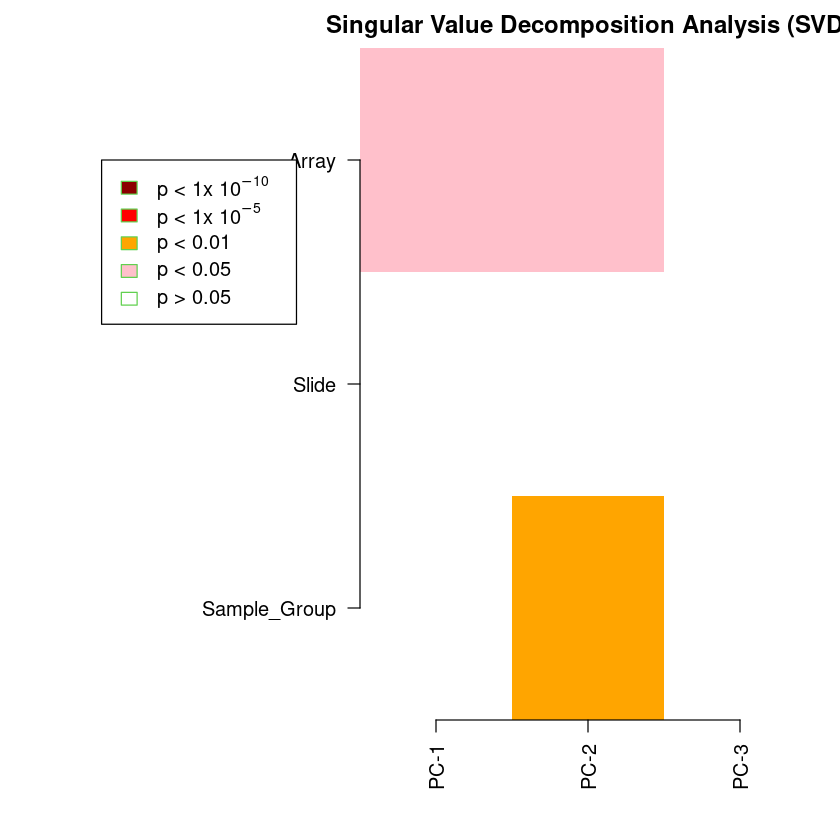

In [10]:
champ.SVD(beta=myNorm,pd=myLoad$pd)

In [11]:
myCombat <- champ.runCombat(beta=myNorm,pd=myLoad$pd,batchname=c("Array"))

[===========================]

[<< CHAMP.RUNCOMBAT START >>]

-----------------------------

<< Preparing files for ComBat >>

[Combat correction will be proceed with 832552 probes and 16 samples.]


<< Following Factors in your pd(sample_sheet.csv) could be applied to Combat: >>

<Sample_Name>(character)

<Slide>(character)

<Array>(character)

[champ.runCombat have automatically select ALL factors contain at least two different values from your pd(sample_sheet.csv).]


<< Following Factors in your pd(sample_sheet.csv) can not be corrected: >>

<Sample_Well>

<Sample_Plate>

<Sample_Group>

<Pool_ID>

[Factors are ignored because they are conflict with variablename, or they contain ONLY ONE value across all Samples, or some phenotype contains less than 2 Samples.]

As your assigned in batchname parameter: Array will be corrected by Combat function.


<< Start Correcting Array >>



~Sample_Group
<environment: 0x61a34ce500f0>


Generate mod success. Started to run ComBat, which is quite slow...



Found 4 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found7batches

Adjusting for1covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


champ.runCombat success. Corrected dataset will be returned.



[===========================]

[<<<<< ChAMP.SVD START >>>>>]

-----------------------------

champ.SVD Results will be saved in ./CHAMP_SVDimages/ .


[SVD analysis will be proceed with 832552 probes and 16 samples.]



[ champ.SVD() will only check the dimensions between data and pd, instead if checking if Sample_Names are correctly matched (because some user may have no Sample_Names in their pd file),thus please make sure your pd file is in accord with your data sets (beta) and (rgSet).]


<< Following Factors in your pd(sample_sheet.csv) will be analysised: >>

<Sample_Group>(character):Cellline, Coriell

<Slide>(character):206891110001, 206891110002, 206891110004, 206891110005

<Array>(character):R01C01, R03C01, R07C01, R08C01, R02C01, R04C01, R06C01

[champ.SVD have automatically select ALL factors contain at least two different values from your pd(sample_sheet.csv), if you don't want to analysis some of them, please remove them manually from your pd variable then retry champ.SVD(

Sample_Group Slide     Array    
[1,] 0.003609347  0.9074465 0.4049149

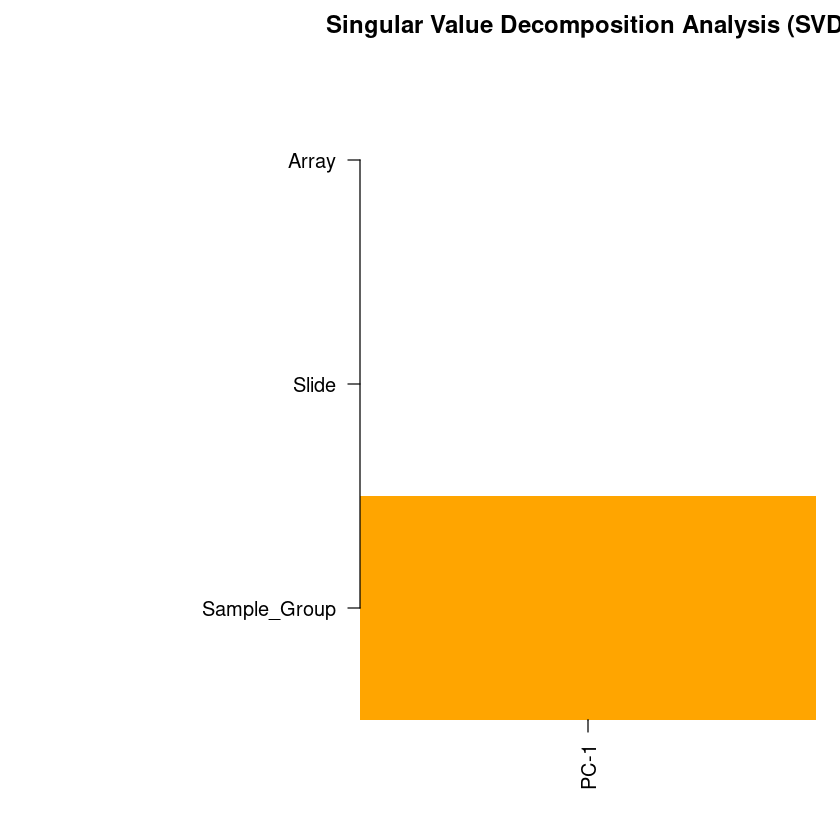

In [12]:
champ.SVD(beta=myCombat,pd=myLoad$pd)

### Bestimmung und Visualisierung von differentiell methylierten Sonden (DMPs)
<img controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABzMAAAClCAYAAADYpdD3AAAABGdBTUEAALGPC/xhBQAAAAFzUkdC
AdnJLH8AAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AAMAHwD/hJvKbwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kHFwopN3Md7O4AACAASURB
VHja7J15fFTV+f8/586WyUJWQhIgQEIgEESQJWwCFVxarYpKUVwQtO62Lt+6tP21Wqx+rbUqVUGL
+rWIgIIrSLGCguwiuxDIRgiQfZ/MZJZ7z++PyYyJJOTccCd3Jnnerxfty+Tk3rM8z3M+5zn3nstk
WeZgDBwMEgDG0C4cgMIBBkA6Rzk0l4NAOQ5AUQCDJFCOA4aOrscBBei4Ldx7TWjYFrXlGPP2ZYdt
ES3XQZsBQObi5UTHmaPjcQEAj+It19G9PRww6FBHRfGWk5iYHxiYmM2K+BUXsB3Om22HCbRFhS1y
QX8RtjHFW4b8pfO2yLn3mkHtL9xbT81it6i/CMbuQMZ4JuovHdiimnERtUW1vi8Su2Wl47gYDLYo
GrtFtY5WsVuV7wdA6yjQVrfpGbu5gP/prXWC3V9E66iX1vHrsSDXOqL3llWumzTVOlzMFkNhbRCI
OgrbIkjrnK/WUeMveuluUd/XK3aL+rSuWkcwduuldQLqLxrFbjU6gtapoZvXCZTu1lLrqPEXzede
3mL8oJ0fBLu/yCpit1b9zZsXV5rm5DXWOgHNMQZxXqcnxu5g1zpqc/JaatDultc535y81CqIicDF
irQMTB0isNjl3HvhjurJBeuoqs0quka4GwX7UfSiau7LBRujZVv8dWQaXk/NfUXLCgR2fz9yMYPg
OtiicB1VGY9gUaZZKDlrYtFqnKGxbau5rxq7FbFFNTE5EP4iZDc6+ovWQ6jKJgIwx2jm94Lzgb8M
064TuY7+wjWOd1xjmw2E1hGKEVx7X+mJWodzdTpCD62j8ODXOmptrKu1jqo1jo5aJyDzmsb+Ag1j
t1qt02GcbR7nQGgdLcdFEfU/ndapaueXQMRu4RChQ+yGSp8OZq0jvAbUSesEYl0QEK3DtLXtQOV1
WHfI64TKOlWvvE6AtA7Xw6d1XKeKaB01GkZVTl7DvI5o7A6E1hHOheiodVStXXSM3cGsdfwPLwez
1lEZ9PTQOrrn5DXsyPbGhcmyzBljAJi4wQg8leBrhNA1ofH1VJQTbouGdeQq7Itr2Ieq2qzTOAds
/ETGRfB6utuY1rYY7H5FthiUdQxUPwZ97Na6LRS7e4ZPa2yLAWmLTm0WbYvauEj+EoSxW6d5P1Cx
W1PdRjoiKOuo8I6fQtZT6/AWBkZap3v7S3fyab20Dm9RuWBdm4fK2sD35kyo627SOhr6NOV1QrKO
vnsGe15HVI9RTr5jzcgY+UtnbcL3gACTgjuvo3nsDkKt49/MZKKzGUEQBEEQBEEQBEEQBEEQBEEQ
BEEQRBcgURcQBEEQBEEQBEEQBEEQBEEQBEEQBBGM0GYmQRAEQRAEQRAEQRAEQRAEQRAEQRBBCW1m
EgRBEARBEARBEARBEARBEARBEAQRlNBmJkEQBEEQBEEQBEEQBEEQBEEQBEEQQQltZhIEQRAEQRAE
QRAEQRAEQRAEQRAEEZQYqQsIgiAIgiAIgiAIgiAIgiAIgiBCn6adu8Hr6qgjiKBBio+HZexF53UN
/2amwgEGgLFz/4GacgAgdVCON//r6BVRzpvLMbFyjHnrec77CraluSnooJh4m0Xb4qtjR20RbHMg
xlm0LQAgc8AgWE7SoY6qbFbg3qLjJ9oWzr3/IAW3vyhcW1tU2xahckzstXS9/IVzQIE+/hKoOKZZ
vBP1P/5j0GbB7C/N9dMydkNjf9HLFrWO3YHSOsJtYd0nduumdZj2/qK11lEgNr/o5S++awar1vHb
WBD7SyBsMSBaR6e4GAprA9E4pjRP0pppnQDYosIBSdJR6wj4vpq1tF5aR3RtoFfs1tOnu1PsFl0b
aD5+aufKIM7rdKe1AWmdrvUXrWO3Gt1NeZ1zj7NQTl4nraMmLuqldQKVkz9ff3EdyUH9v96B+0gO
CCJYCMseB2axwHRBVqf9xehzUJkDRoHJ3pcAEXF4CARstFiEidxbRGgoIpMA/7GOook7g+Cmp8iE
ixbBrqMFqkFAQSgqJj5JRYA1CE7OwskzFXWERnVURMUQB2SITywGJmjbENuk5Kx5rDvyLUXMX7iI
jUHQxrj2tuMTnkzUXwTijvDiTzA55Uuysa62RY39RW3sFl2UKyoSbcIJOcHYLeQvzWUNkoCNqYjd
rAN/4Wr8RWkup5G/8OaJSFN/CfbY3eyrIvogEFpHxBaVZlvUQ+sItYX/6PukdTqvdThvtkWmrb+I
tlk0wSfzINc6gk86aq111MRuX6xlQax1RMdZJC4GInaLzvs8QFoHAvagdlNR63WqqL8oio5aR6Rv
IP6Al15aR1a0j909TevwAGkdrdeponkdDgF91420jipbbM5HBKvWgWjc4frmdUR24oRtLABaR+Ea
x+4A5XVEYrdeWkfUvvXSOq1yEh3Fbq5vTp7pmNfRM3ZDNC/XxjV5YyPAOSxjR8OYngZmMoHoXjAV
+Rm9Ueob4Nq3H5AYmMXsf1Cgo9jdVk7e6Gu8QWAC8Ad1gXKSyOPKzY5ugGA5AYf3X491XE4SDOyS
oHWITGQtyzEm1hbRciJtMQh+JdUg2BbR8YOgjaktp6a/RaKAUH+L+ovGtsiY+EdufYJO1F+0tDGR
ibkz4yfcFsFYImqzksa2yHXwFyZYRzWx2zfOXR3H1PiLoMkGLHZD1Ha0tDGphTAXiWMaxQg1Nisa
IzQfFx21jqRmTtVY66jyKx39Rct5Xy+tw5hXWAez1tHcXwKgu5lgjNBL6zAGSFxbG9Na66idX5gO
Wodprbs11jqMeRNnEgteraMm3umlddTML3ppHQAwSuJ+pYfWUav59dA6BqlF8jwItU4o5HXUxG5J
Jx3BWLO/BLHWYZJ3ng7m2K0qF6mX1oGYv+iqdVRoftI653lNPf2FBXdeJyA5eUnM/86pdWQZ8qnT
MF08GZG/ugFScpJmp/j4yom+ySzS36Jv/6qpo+iGuUg53wMrIg9QiD5L4HvIg2nZFsFral3Hjso5
DxyCc+t2cJcbLCLivHSEsTPiRctyomVV7EcJFxZui2jyBQG4XiDaotM4SwEQ0lqWkzS2WV3L6egv
kk51VNUW6GeLTMNyIRO79Yx3PS12i9ZRx9gt9cD5JRRiNwvy2K0qNumodViQ22Io+EFI6IgQ8Jdg
1zohsTaQgtvGAhIXddTdemmdUNEb3WptAB39pZusDUJBR0g6atWgz9eESs6EhUAdSeucd1wM9rwO
rQ06d1/OObjbDQAwpiQFf4wP8jmQsRDJ6wRp7JasYeDNu8HMYDivBxQkEARBEARBEARBEARBEARB
EARBEARBBCG0mUkQBEEQBEEQBEEQBEEQBEEQBBHicE59QHRPe6TNTIIgCIIgCIIgCIIgCIIgCIIg
iBCH9jKJoLJH2swkCIIgCIIgCIIgCIIgCIIgCIIgfDDqAqKbGiRtZhIEQRAEQRAEQRAEQRAEQRAE
QYQ4jHYziSBCos1MgiAIgiAIgiAIgiAIgiAIgiAIgiC6O/7NTNGjazkXO+dWtJwaRK+nVx1Dog9D
pI5a3rvH9iPXrlyPtkXyF4rdFHModpO/kL+Qv5DWIa1D/kKxm/yFYnfQ+ktPtEXyl+4fu0Exh7QO
+QvFbrLFHq91QrYPFcX7T+M6Sr4buuWOG8I54OGAIlBObv7XEQoH3ALtkhXv9bjA9dSUUwTq6FG8
/4TqqGh3bw51dRQqJ3vLdVRU5oAs4HxK871FDNsli5Vzy+jwLGXOm9ssYosQt0WXLFbOI6sYZ0F/
UXTwF185rW1R1rKOPp8WsUXBIOsS9Bd3s81ykTYLTAY+fxHBKWCLvtgt5C9ce39xi/qLok/sllXE
bo9OsdutiPW3R1bhL9DeX4RjN8RiRIe2qMJfuGDsJq0jYDsB0DoitqjGX4Jd6zgFtA7XUetwBL/W
kbkK3U1a55y6W2uto2iodXh30zo6xu5g1zq6rlN5ANapGmodWYW/iGodTw/VOiIxWVXs1kvryCGQ
1xHU5yGR19Fwnao2r+MJgL/ooXU8Oud1eBBrHV3zOrwbaZ0QyesEu9ZxapmTV6t1BDfDtFynBsJf
ZJ20DleTrwmWvA7n4G43uNvd5h+fj78YAe85ykbW8bc4GQMM6PjcZV85kV1e0TNzJcl7wQ7r2HzN
jurou6/I7Q2Ch/EamPeCTLDNIv0oQeyca5E2+9rCBOsoXE4Su7dRTTkRW5S0tUXGvPcWslnBOkoq
/EUEBq+vauUvEvP2jSRqi9DQFlX4C4OYTzNBpzZJYm0xSmIxSpVfCcYTkyRus7rFbi3rGIDY7fMD
LW1Ra38xMPG4GAh/Ebo30zbGi7SZqfAX0ditp78wn50FsdZhEOtvrbWOz6+E/UBQt+mldUySmH3r
pnUQ/FpH67VBoGI3dNQ6ov4iaVhOrV+J2KJuWocDXLCOBtE6QietA+1tUXN/EYzdqrSOhn6lep2q
wl9EtAGXxGxRVOsYRNY5gdA6zX4Q1HmdAMRurbWOQQqBvA4TtIcgz+uI+kug8jqGIM/rCMdunbUO
5XW6MK8Dyuucb14nILEb2q1TRf2KqdU6goFRy3VqILSOJLhW1VrrqM3Ja6l1ROfAs7QOY2AWy3mt
+dvzF6PqxIFgORGnU3NN0U0Kre8rGlwB8Y/rMhX3ZRqPi+bj3I3qqHVbWCBsQo3NaugvgRhnpqMt
ah0jJPLp4I3dTFv/64n+orktSt3IX0RtQoXt6OUvko7zFcXu0K0jg44aRketw3pi7FZTRynI69iN
YncgbFZzfwH5S6jHbk39oJv5C9li6OZ1ApEn6k55nZCI3bQ26LIYSnkdit3BErt11ToUuzWpI84z
RkggCIIgCIIgCIIgCIIgCIIgCIIgCIIIQmgzkyAIgiAIgiAIgiAIgiAIgiAIgiCIoIQ2MwmCIAiC
IAiCIAiCIAiCIAiCIEIchVMfEEFkj4p216LNTIIgCIIgCIIgCIIgCIIgCIIgCIIgtEPD72nSZiZB
EARBEEQPo66uDm63mzqCIAiCIAiCIAiCILoREqM+ILqnPdJmJkEQBEEQRA+isbERp0+fhtPppM4g
CIIgCIIgCIIgCIIggh7azCQIgiAIguhBnDhxAiaTCSaTiTqDIAiCIAiCIAiCIAiCCHokAOAAXDLA
O/g4LAfgUQBZsJxH4GOzCveWFSnnVjquo+96HX3olguWAwBZoM3wtVnxtv+c12u+t2hbOroeh7dv
RNrilgXbwr3thkBb3IIfcXXJ4uWE2iI4LrIKW3QL1JE3lxP1F1FbFPYrwXERsR1Rf1FU+IuacrIa
f4G2/sK5drYo7C+KmL9wQX9RE7vdAYjdbh1jt0hbZBXjEojYraW/iMY7Dxdvi1vQX1xyx+VUx24N
/UXhgv7C1WkdRSNN1CmtE+DYXVFRgV69esFisQAAHE1NKKuoCnqt41GhdRTSOu3PB7KgLeqgdVra
TrBqHTW2qKvWkYNb64j6i55aRw4BreNRSOtooXXcOmodId2N4Nc6sgqto1fsVpPXkXXQOlARu/XS
OqLrVD21jsxDQOsEKK/DddQ6WsZuYX9RgnudGux5HR4CeR01NqaX1lGVk1fU5eS1zutAJ38RWqfq
lZNH98rJyzz4tY5vHDurdYyA9xucBoGzaxm8Z9wyjcr5Ki4J3luojsy7QytyFK9IHQFAEnx/1deO
jq4pAeCs44JMZd8wJtYWoTZDrBMliN2Xc8Ao2I8GwXERLceY+HdmDSJ1ZOpsgolcD2J+ZWDi48JZ
c7RlXevTkqgtqvQXreroG2cty4n6C2OAQSiqi/mLmthtUNGHauKdaEzWLHar8BcmaIuiMcLvV6K2
yLTzF4PouDRXQMSvhNrdbItaxmSDCtsxCMQcxgTnF6aP1vH1oyqt0wWxm7UwvMqKCtgdTUjsHR+0
WgdccI5Wo9sCoXUMYvfWTesI9iPTSetw3mwTkti46KF1GFTYok5ax1dHoflFJ63DQ0DrMK5u3ujy
daoKHaFa6wjGbhGtY1CxBtRD6zAABoN+WocJ2qKw1pHEbVZLrSMxsQSW31+6OHaDB39ex+8vgnkd
PbQOVPq0HlqHseDWOn6bCIDW0dL31WqdDsdZUOuIaiKfv2ia/9FwnRoKeR2mot16aR2O4Nc6/jgW
AnkdrWO3llqHQ9ucfCB0hEFQ6+idkw9mrXNWAOqE1jG2DO5aTlTCi0RoG5S0vp5g/6prcwA24YQF
BNOnLarqqJMtqrFZ0cmeaVgOKssxncqJ+oxe/sJU+LRBLxvTegM+AHUULaunv0jQZ1wCERf1srFQ
sEU1tqPb/CLpMy7tleOcQ1F+fKTwzJkzGJqZGdyxW0Vs0lXrBLu/qJgr9YjdqvT5OcoqjZVo3PAP
uI5tReRVT8Jywc9pbUBaJ6Cx24Cu94OQ0N0a60qK3drE7pDI64SALerVFj21jvAmjp6xWzAw6rpO
lYLfxkJC61BeJ+h8X68cv66xOwB1pLxO8GkdNbqbtI42c0x742yEjqjpZCK0obHuQWNNXUAQFBep
D4OaQYMG4fjx4/B4PEhOTkZ9fT3qamtx/NgxREdHo7a2FuXl5ZAkCYwxGAwGZGZmon///pAk+tw6
2WNw07jhRTi+/wiekhwo9lpY68upUwjS3QRBEARBupsgCPJpIsQxUhd0TzyNdlR8fwDmqEjEj76A
OoQgCIIgCABAv379IEkSKioqUFxcjLy8PCQnJyMxMRG1tbXo27cvsrOz/eVtNhu2b98Ok8mElJSU
Vtcq27EHRWs3oKmyCuk3zkLfn11MHUzoRsPav8K+6XXw+jJE/PxxWC68EsY+GdQxRFDiPLIRcs1p
WIbPgCG2L3UIQRAEQRAEQRDEOaDNzG5K45kSbL7jQURnpONny5YgLD6WOoUgCIIgCBiNRqSmpiI1
NRUA4HQ6MXz48HbfuoyMjMT48eOxe/fuVpuZZzZtQc7b76Ny7wF4HE3oM3EsdS6hG/at78CxfRmU
ulJEXf0nhF9yH6So3tQxRFDiPLQe9R/+AczdCGNiOm1mEgRBEARBEJrBOfUBETwoGtojbWZ2U0yR
EUgcPxq1Ofk48fl6ZN4+lzqFIAiCIIiziI2NxZYtWzBmzBhYrVZUVlbi5MmTaGpqQnh4OJxOJ+rq
6pCTkwOLxQKryQzz8QKUffQFanKOIyw+Fhm3zUHKtCnUmYRuuHK3QS4vQNQ1f0b4z+6DFJVAnUIE
Jc5D/0H9+7+FIWEQrKPvhDExnTqFIAiCIAiC0AzayyS6K7SZ2U0JT07CqCcfwforb8Tp9ZtoM5Mg
CIIgiDYZMmQISkpKsHfvXjidTkRHRyM5ORmSJEFRFMTHx8NmsyEyMhJjh2Tiv6++gaING9Gn3o6+
M6dhwC+vQO+LLoS1D70FR+hD47f/B+exb2FMyYQpYzJtZBJBTcNHfwRvsiHqumdgGjSOOoQgCIIg
CILQFIm+QUl0U3ukzcxuDgPAKYARBEEQBNEOVqsVaWlpSEtLa/P3DocDJ0+eRILCcWTJO1D++y0a
Ghtx8e1zMWjWVeiVPhCSyUQdSeiGJ38blKoTiJj9vzCnZVOHEEGDUlOLsl/dBnfucXAA5sHpME2W
ETZ+DqSYFOoggiAIgiAIgiAIQWgzs5siO52oLyyCZDYjPFG7NyXyylworHRhcKIFg3pT4pIgCIIg
ujuKouDIps3of6IENTv3wJqSjNTp2Rh6+1yEJ/ehDiL0t1GnHZDdMEQlglkiqUMI3eGKAk9uHkp+
Pgvc7fZ/uEguOwgUVKPX7FfoO5kEQRAEQRAEQRAqkADvOcoepeOPw/rKKQLlZAWQBQ5o5lzs3goH
PFywnEhbuLeOIh8glZvLCpVTcT0t2/LTcXGUVeDwP9+ENbkP0n51jf/nHu4t57bZ0FBYhNqc3Dav
6WmjzSerXFj8dRX+d10lDp1q8tZR8d5bBLcs9gFityJWzqN4799hfwvW0dcWUT/QzF+4mL/4ywna
jogtKoK2qMZfPIq4v6jxPw5Bf4F6f2m3LVzcFmUVNiYSF0X9wK2hLUJF7FYCFLsVjWyR8x/tW6vY
raiM3aL9LWqLevmLlraoKkaIxm6uzg/00Dpq/EXWQeu0nF/O+p1HxvHP1qPuqy0o2bwdcRddiEF3
zcOAGVPPuZEZCK0jOm94VJQL5titWuuI6G4Et9bxz0Od0DqcSQBj56V1VM1D3UTr6BW7uYrY7dYp
dstK57UOb2jwbmS6XK1+IWVUAkYHap55TpPY7ZFDQOvwwGgdaOwvvJv4iycE/EVU68haax298zoQ
s52g1zpycGsdVXkdrr0+kDWOY1rndTwq/EXLGK+11gG6V+zWQ+twHricvKJlTl4JvZx8MGqdYM/J
66Z1VObkg1nrtLym5rFbQ63jK99Zf1H9ZqboiaWMiV+QCZZnvOMKMBV1VNVmpmHfoPnoVw3bwtiP
fah4ZDSeKUVD7gkkThqHpCkTWkURe3kFTn/5FY7/30rYik/jpvy9bfZ1yzGpdyhYtbseh4qdmD02
GlOGRPw4foKW2k6O6bz6UWhcGMS8iam0XYGMIVPhVEyFQQrVkXubzZjGviBiizr4HzrpLx3OfoI2
K3Q9Nf7CtPMXtbGEc3HfYiJxTEXsZiKN4Sp8RTQma+gITE2fq6ijcNzR+JqMQfM5kGkZu9X4tE5a
h3Nt404gtE5btui2NeLkui/x1T+XILamAQN/fimG3Hojij1NSIrupYnWgcq2aKUX29I6wRa7O6V1
WMe2CC3rGAito0aPccD231fgyt2KyMsfgSVz+nn7PtMySOiodRAAW9QjdouOiapyAlqH8x/HRa3W
4bZGnM6e7t3I/GlZk+KNj3aHJsJETczRQ+v4Y04AtI7mPk1a57y0DlMZu0VsjENbtI61qrWOSLs7
oRePHj2KvXv3YsiQIRgxYgSsVmtgtY4U3FpHuB+5Cs0ouk5VazuCMU/LvI7wfKmxEwYqr4MepHVU
5X9E8zqCOXld8zrQPuYEMievxTo1EFon2HPyXC+tw9TnI7TMJ2tOAHLyWmud89WLRt/NDJJQjINB
0m4C8F9ToKzExDvDoGE5/711KKeqLS3+213fgMKPv4A5Jhr9LpnWqqyzpAS7n1yIqoM/wNwrCnFZ
w9u8Zstx5hzYnufAzgIHiqrdOF7mRC+rpGpcAPH+FrFFCNqiKtsBYBQtJ2k4fhAfZ0kwKIm2WWu/
Aryve4v4f0D8rxP+ci6MkrjNalnHUPCXgMQxUX8R9D9RcRUQG9N6nJk+tujzFxbktii6qDNKGtqY
Cq0jSdrGbs39igHSTxZMjrJynPh0PfJWfgRbRQXGXHctRtw5D9HpA3Hi++/h8Xi61K8C4QeB8BfR
pwT19BcJGvqBxlpHjY7wtdlz6gDkmjMw9s2CFJ3UNX4FbW02UFonmGO3qn7UoY4+G5Q6YTuccyg2
m/+/FbT2OwaAxUaft/+pnl/0moc09peeGLtF66ir1tHTxjSuo16xW42ubTnO//73v/Gvf/0L06ZN
w3PPPYchQ4b02Njti4u6rVNVrJElLdscAL8SXUvr6S9Bn2PU2F8YAqN1DEwnf1HRFqZ1XkfrGKFi
nPXQOqHgL2rWqXponVDKyQd77BasYrvjLKm5CBF8uG2N+HLWrTi5doP/Z87aOhSs+hjRGYMw9I65
P/68phbf/+UF1Bw+iqz7F+Dyz5bj8s/e6/AexdUefLq3HhYjcMfUWGzLc2DMn3Nx+FQTnG4u9Pq5
GhvTyxZZCDhBKPgpo2CiSR+ybmQTRIjbYwjYIusmfRgssbvueD6Ovr0cx/5vBbhHRsolUzH01jmI
HjwIkCRYLBYYDAbd6teT/KqnzoFq4G4nwGVAMnofOSa6Xew+3zqWlJTg6aef1iXu2LiCEWcKUCHL
P9osA2Iee6RL9SJBsZvmlu5rYzt27EBNTQ3Wr1+PkpISml8olhA9UOtQ/Ca00ozU3dQ3wQ6t+EMY
xePB9vsfQ21OLnjzjqLidqOhsAjm6CikTL+4VfkDf3sVpzd9iwsf+w2Gzr8ZYXGxHd6jtM6D/1lV
gu35DlyaFYXHfp6Abx4fiAv6hmH266ewbEctauwyDQZBEARBdAPKd+7BkSXvoHD1Z7DERGPo/LlI
/tkUhCX38a8kbTab/6l/t9uN4uJiHD58GD/88AOOHDmC3Nxc2O126kyiaxaVEi0riXNTUVGBl156
qesW2GYTon41yxsvuQIFHCvt9VjcUINaBsBkBouIoIEhCOK8cbvdcDqdiIqKgsfjwdGjR1FfX08d
QxAtyM/Px/PPP4+nn34aubm51CEEQRAhjJG6IMTgHIcXvQlmMGDglVeg6sgxGCMjYYwIBwA4q2ux
/6//gDUxAcPvm+//M9nRBGddHbjsgSkqAgazucNbVdlkPLu2Aj+cdiEuQkJuqRN7Tzhw0UAr3run
P576tBybjtgwMT0ccREGGhuCIAiCCGGqD+cgd/mHOL3xW8SPHI7Bc69H0pSJSDEZsHbtWowZMwZp
aWmw2+34/vvvkZ+fj6SkJMTFxYG1eGS2sbEROTk5GD58OMLCwqhjCU3weDxwuVwwmUwwmUz+nzOw
VvZHED/l6NGjsNvtGDp0KJxOJyZPnozly5cH7oZmM2L+/AcYBqejaOHzUADYJIbJ2RMQ1ucAJAsD
jGYaGCLoqKysxPvvvw+73Y4nnnii1e8aGxuxa9cu/Pe//0VNTQ3i4+MxefJkTJ8+HVarFUePHsX6
9evhdDqRkZGBn//854iMjERxcTF27dqFpKQkTJkyhTpZY/bs2YPa2lpkZGQgPz8fy5Ytw6RJkzBy
5EjqHIJo5sCBA1iyZAk8Hg8iIyPx6KOPBmU9HQ4Hqqqq4HQ6IcsykpKS0KtXr4DcS5ZluFwuKIri
1dOMwWq1dkpT2+12FBcXo7CwEHa7HWFhYfjFL35BhqcznFMfEMGDoqE90mZmyAUjjuPvroSzpg6n
v94GV109Rv3+EcRfeIF3QnK7UVdwAjFD0r3lZQUehwM5b/wfKnZ+B0N4YXSU7AAAIABJREFUOKQW
CaD2qLUr+Ovn5dh8rBG/vSweCRESdhU48MY3NZg3hWPS4HA8dU0iSmrdiKWNTIIgCIIIeZxV1XDW
1CF56iSk3zgLieNHwxgeDguA2bNnY9++fVi7di0KCgpw9dVX4/rrr0ddXR1MJlOrhbbD4UBubi4K
CgowfPhw6lhCE1avXo1f//rX+M1vfoO//vWvLbSxQqt14pz07t0bZrMZn376KTIzMwN/Q8YgRUcj
asE8jLzy5zBnDcefdm5DUt++qPrf8QjLuhSGqN40MN2UwsJCrFu3Drt374bL5UJWVhZmz56NoUOH
gjGG8vJyvPbaa9izZ0+rv0tLS8MDDzyA9PR0rFq1CkeOHIHL5cKcOXMwcuRImM1mbNmyBQcPHsQN
N9yApKQkzfILDocDx44dw5o1a7B69WqkpKS02sx0Op3Ytm0bXnvtNQwePBhZWVkoKirCW2+9hYaG
BlxyySX49ttvUVpaiuHDh2Pfvn1ISEhAdnY2tm3bhoMHD2LevHlkHAFgyZIlKC4uxqhRoxAVFYVe
vXrRAz4E8ROqqqpw6tQpcM5x9OhRcM5b+YndbofD4UB+fj42bNiA3NxcKIqC22+/HTNnzgQA7Nq1
C3l5ebDZbBg5ciQmTpyIiooKLFu2DO+99x7sdjssFgsWLFiA3/72t6iursaWLVuwfv16cM7x5ptv
AgDq6+uxfft2fPzxxzh9+jQ45/j8888hSRK2bNmC559/Hvv370dDQwP+9re/Yfbs2UhKSoLReHb6
vra2Fps3b4bT6UR9fT3efPNNNDU1ISYmBlu2bAEA5OXl4auvvsLhw4cBAK+++ioAYNOmTXjiiSeQ
k5MDh8OBAQMGYPfu3ejduze++eYbrFy5EgcOHMCkSZPw4osvAvBuCi9duhSbN29GXV0d7r//fjz2
2GMoKirCO++8g5UrV6KsrAzJycnYsWMH3nzzTZjNZjz00EOwWq1kiF0MrY6I7mqQtJkZYjDGcMHD
98JRXonDryyGIjEkjByGsPjYlisSKAqHx+5ATc4xHPjbP1Hx3T4YTCZMfHEh+l8x45z3aHQq+N2q
Unx52IYLB1jx66mxcHkUpMab8cF39Xj+i0qMHhiGp65ORHKMiQaFIAiCILoBMUMHY+iCuQhP6oNe
gwe1OsXBaDRi3LhxGDduHLZv346UlBRIkoS4uDjIsoympiZwzlFTU4PS0lKUl5ejsLAQ9fX1SE1N
RWJiYpuLcIIQXv9wDkVRIMv0eQNCHb5v/O7evRubN29GSkoKfvnLXwb8vlJYGCpcTjhdLlx54xzU
1tZi1aQyXDT3BkgRtJnZHTl9+jSWLFmCkydPYvLkyTCZTPjmm2+wdOlS3HXXXRgyZAiqq6uxY8cO
ZGVlYdq0aZAk75d/oqOjkZiYiMOHD2PHjh24+OKLUVBQgA0bNiApKQlmsxnLly/HzJkzERkZqVmd
q6qqsHjxYhw5cgTx8fEYOXIkKisrW5Wx2WzIzc1FYmIi7r//fvTu3RtHjx7FokWL8NVXX2H06NEo
KSlBeno6Jk2ahBMnTiA3NxcmkwkHDhzAtGnTMHjwYDKQAJCTk4PGxka43W7ExcXhj3/8I4YOHUod
QxDNuN1uOBwOWK1WWCwW5ObmYteuXZgwYYK/zPPPP4+FCxdiypQpsNvt2L9/PxRFweTJk/2bmWvX
rsV7772HoqIiPPzww5g4cSJsNhsOHjyII0eOQJZlREVFoaGhAQBQWlqK1atXY8WKFQDg38wsKSnB
J598gg8//BB1dXVgjPk/G/bJJ59g7969qK+vB2MMf/nLX/Daa69h06ZNSE1NPatt+fn5mDVrFsLD
w3HnnXfiwIEDcLvdSEhI8JepqKjAxo0bsWbNGnDO/ZuZJ0+eREVFBdxu91lvZW7fvh2bN2/GsWPH
Wl1r06ZN2LRpE3JzcyHLsv9I6/LychQXF8NkMqF///5ITk5GWVkZXnjhBRiNRtxzzz20makD9FgL
EVT2qKFBUlYpBEc/49ZfgcsKznyzBZU/HEFjRSUS/L9m4BJHfWE+Phg2AZAYmGRA2o3XI+ue2xHZ
v+85L+9RgFc3VuO7QgdumxKLLw7U45cvncR79/TDBf3DEBdpxFdHbFi6pQZPXZ3Y7nWm/W8RrCbg
P48OoDEjCIIgiBDAmpSIvkmJHZaLjY3Ftm3bcMEFF8BsNqOqqgpnzpyBw+FAfHw84uPjwRhDXV0d
UlJSkJeXBwBISUmhTiY6DeccY8aMQXx8PF566SXU1NRAlmVcVnsAGfRmJnEOTp06BafTiTVr1iA7
OxuJiYldXodLL70UDz30EEyvXwoeFQXQwx3dkgMHDiA3NxczZ87E3LlzIUkSYmNjsWzZMhw6dAgZ
GRmw2WwAgOzsbFx11VX+5DFj3iOzN2/eDEmSkJWVhfDwcKxbtw51dXX49NNPkZaWhsmTJyNCw2+u
hoeHY/r06Zg0aRKioqKwdu1abN26tVWZyMhIXHHFFZgxYwbS0tL8WiAsLAycc5jNZhgMBtTV1fnf
cCorK0NtbS369euHyZMn+x8qILRl7NixiIiIgNPphMfjQWxsLMxmOsaaIHwcOXIE3377Lfr16weH
w4GcnBxs3Lix1WamT2fGxsbi4YcfRk1NDQBg4sSJ/t+PHDkSM2bMQElJCYYNG+Zf2zz11FN46KGH
wDmHwWDwa4yYmBhccsklSEtLa/UWaGRkJMaPH+/fJJQkyf/7l19+GS+88AIA4MSJExg9ejTq6urg
8XjabJtv3gCAhx9+GLfccgs4560eIO3fvz9uuOGGsx4oWbBgAW6//fZWP/PF6auuugqjRo2C3W5H
cnKy//czZ85Eeno6HA4HGGP+fpg2bRqmTZvW6lq+DeH6+nr/Zi3RtdBL+kR3tUdaRYWqERgkzPzg
//DB8Eko+PBzDLjc+7YlMxphjoyGu7YOzGTEqMd/g4xbZsMouODZnWfHe9vqMKi3ETdn98K902Nx
xzuncdnfi/D+3X0xuI8ZN2VHIzOpfYE84/kTOFnlxNbfp9NAEQRBEEQ3IzMzE/Hx8Th+/DhcLhcS
EhIwatQomM1myLIMg8EAzjmGDh2K1NRUhIWFITc3lzYziU7jcDhQWloKm82GVatWoby8HPX19bDZ
bOh3sYKMgdRHRPuMGDEC4eHh+PTTT7v83omJiTCbzXjkkUeQlJSEChqObo3vLZu+ffsiJiYGAJCV
lQXOOYqKimC322Gz2cA5x4YNG/xH9Q0ZMgSzZ89GZmYmYmJiUF9fj6amJpSWlsJqteLrr79GaWkp
5s+fj8TERE2PEQ0PD8fkyZMhSRKqqqra3HS0WCxIT/9xbd/Q0IAdO3agqKgId9xxB/r06YOLLroI
q1evRl5eHmJjY6EoCurq6jBnzhxERUWRcQSI1157DU1NTbjmmmvQ1NREHUIQP+HQoUP45ptvMGDA
ABQVFeGmm27CqFGjWpUxmUwwm82IjIzErFmzzroG5xy/+MUvkJ2djT59+sBisfhj48CBbYvQlJQU
LFiw4Kyf9+3bt82f+67nu3Z0dDTS0tJQUFDQbtsYY7BYLGCMYcCAARgw4OyXSfr164c5c+Zgzpw5
Z/1tew+ZjBw5ss3v7l5wwQW44IILhPrdt2n77bffkhESBKEpRsB7bK2iABI7906paDngxw97Sh2U
4/B+5qbDchxQAEjooI7ce02GjtvCecflAO990XxvLdrsK8fYuV/75ry5jufob8lkRPnWnSg/8AN6
X5gFS0wvjHnqdzj8ypuYsfwNRPzkTUyZt9+HnAOfHmiAU+bIK3Pj66ONuHdGHN6/px/ufvcMrnu1
GAcXpiMqTMLUoRH+tnAOGJo757K/n0RBhRPfPDEIfWNb75V7OGAUWHd5FMAgYGOy4i0j1N8ckKSO
y3F4792RzQr5i8D4tbTFjmyHc28dhdsMMb/iIrboK6soAHibT1b5ngrjTPL2jV7+InVcTmHNfoCO
bUzS2BZb+ktH8c4g4C+BqKPouAj5S7PdCvmLitgt4i+c6Ri7ITi/8I6v54vdDBqPXwjYokgdNY/d
gdA6zXUMVq3jux6YqL8wJCYmtvt2U21tLYpPncZFF10EDm8y/+DBg+c3Vzb7NIOYv0gi/qc0t1kH
f9FL6/j6J1i1Tnt+5XQ6UVNTg4aGBgwYMAD9+vVDmNWK2tpaJMUcAGOl7Sb3hbWOqF8JXq8z84sk
OqeKaJ3m6/V0rcM5x6effgqHw4Fbb70VADB27Dg8+JvfdKwjmuNOZ7UO5xyLFy9GY2Mjxo8fjzFj
xuAv8aWI5mLrY+G1gRTkWgfisVs3rcMAkfcGO7LFAQMGwOPxYOfOXRg3PhuREeH49ttvkZubi4su
ughNTU3+N+icTicmTZoMhXN8ueE/OH78OJ588kmMHj0a27dvx6JFi+ByuTB16lRs3boVc268CZmZ
mec8sr2zWkdqZ/JoyxZra2vx8ccfY/Xq1bjiiitw2WWXwWq1YtLkKUhKToGzyfvm0/fff4/+/fvj
zTffhMFgwPTp0zF9+nQwJqnTOoLrVKHYrefaQGCu9GsYFtxaRwbldQKhdbokr6NG6wjqbr20DuC1
xY7yOg0NDaiqqkJaWhokScLVV1+NSy65pMP5vCVOpxOffvoptm7dikcffRSD0tIDrnXi4uKwcOFC
HD161P9wzE/9xWg0Ii4uzv/Gv9r+5s3GoHDt8zrp6YOxceNG1NbWIjY29rz8RfblQYNU66jS3Tpq
nWCP3RyCtqhC63BFn5y86ryORlrHp7t11TqS2BHH/Dxy8saWjZUEb+abyDsqwwWCjd8YRBPYTMz4
OwwiLYzQIFBHbxay43tDRR8acO728OZxaa9+BpMJIx+5F/v/tgiH/v4aEkaPwIArL0PC6AvhKK/A
D68uxfjn/yycOH92bTk+29eAJ69MgMEg4e/rKlDr4LhvRiyW/boflmyqbn9yBnDlPwqRW+bGpifS
kBpvalNIc0nM8UQWkwoAScQmuNDweW0CgosCQX9RBMRVS1sU9j+tEti+yeIctqgoCmSFQ1Y4lrz+
Gt54YwkKCgrg8XigKAoYY5AkCYmJiZg/fz4W3HkX+vfrB5NROudTwwrEAxya23I+/tKqrNIszjVK
vnDBSNzSX4TErKSNLfr7hnfch6KbLr54IonYouA4q43dEIjdXFA0aR67BRMRCvfGMSZQRxF/8c2n
XKQfIbaprwjaoqwmLmrpLy0XvBrFbi7Q5z77gqCvqNqs11jriNoi00jrGAwGNDmbYDJb/A1v73gh
NbFbzSaz0EYTmtusYexWuLiO0EPrKFxdHXXROm34i8lkQkJCAsaPH4+lS5fCarVCbvbBhn/NRdOu
leeldToTu5nIwxYqtQ7XaE5tOR9opXU0j92CWoefp9ax2+3Iy8uDoijIzs7G/Q88AFnmbSYr27WJ
To6L3W6H1WqF2WzGokWLcPU116Ly/2V1PIYq/UWkg/TSOlzF+kp3rcPOX+uMGjUK119/PZYvfx+z
Zl2LqMhIZGRktPrG5YQJE7B48WKYzWbExMYDjGFAan8888wz2LNnD9LS0nDHHXeguroaiqLgzTff
xLBhw/Hdd99h7eefITk5Gb/+9a/Rv3//gGsd/ETrlJaW4t///je2bt2KWbNm4eqrr0ZcXBwAoFev
aFw4ajTyc4/73yitr69HbGwswsPDsXHjRvTt2xcZQ4aq0zod2Y4KrcMFM3xqYrcWeZ1OxW49tU53
yevw4NI655PXUQKwTuWiD5aKxu5mW+SCG0gQtMWONirGjx+Pp/6yEIX5+Thy5AjCwsLO+n7jiBEj
MGnSJERERrYZn9xuN3bu3Amj0Qi73Q6Xyw2DyRRQrRMREYHZs2fD5XL5j47+qdZJSEjAbbfdhgMH
DnQ+r8Nbb6holdc5sH8f9u39HiNHjkR8fPz5ax29cvJq/EVE6wi2WVTrcJVaJ5hjN1e0z+uIxm7R
vI7oPK06r6Ol1hH0l4BpHcG+FPGF9tapRl9dTAJWwAAYBcsZJDEjkJhY0lzrcoyJPZEAND8VwATL
aXi9jtrCjAYMu/NWQFFw5putOPr627CdKMaQW+dAcbpQffjoWX9zrnGuc3BYzQbERxlw9agocC7j
mc8qcKy0CY9fmYDfXnb2BGSQvAb9y5dO4ugZD756bCAGxpvaNEiTQcxRTJJ4OaH+FizHGGBiYvYt
5C+CNqamnIGJ9c352pgv6XzmzBm8/PLLWL58OUpLS9tMRnPOIcsySkpK8Oyzz+LZZ59FYmIili5d
2uo7MD/F2MX+0hnfF7UxowpbFP1ajBp/0cxmu1Hs9j+oEoSxuzO2Y9T4epIkJv4YA4yCtmiWtPUr
UX8RbovWWoepsB2d/EqtvzCN/KWsrAzJffrA2LwQKSkpafVEcaD9Ra/YLaoj9NQ6wrajk9bx1fGn
tsi591QIxhhqa2uRm5uLyspKuFwupJaUIDZI1xB6ax0tbcwUAH8xGzS0xXbKVVdXo6ysDEajEadP
n8bvn3wSo0aNOuu4tbbqJwnGvPbGpampCYsXL4bL5cJ1110HANh5UxhGMw3XqZJ2sTtgtght/SUQ
Wkc0dnekdcLDw3HttddiwoQJqKqqgtFoRENDA/Lz8xETE4Pw8HBYrVZER0e3+rsxY8YgIiICp06d
gsPhQJ8+fdCnTx+sXr0aJpMJsuxBTXUVbrrpJnzwwQf46quvMH/+/C7VOmfOnMHSpUuxf/9+3HXX
Xbj44otbtcMged/a3LZtKxobG5GdnY3t27dj6tSpsFgsKCwsxKlTpzB06FD98joa6+5ArA1MoaB1
gjyvo7Xvd5XWOe9cpMZ+JbqWVqWJmHbjJ2o7Y8aMwZgxY/D888+3W+YXv/gFJk2aBIPBcJadKYoC
m80GRVEwceJE5OXlISEhodW3JAOhdRYvXozHH38c8+bNwz//+c82yyUnJ2PSpEkYP348Ghsb/d9T
Fs3r+GzQGIC8zhfr1uLPf/4zHn30UYwfP/789LRojAiBHKMxRHKMQR27dcrr+N7IFOmbUNjD0lPr
+Mp31sbom5khDjMaMezu+UgYMxJl2/fgyOJ3wAwSDBaL6o8sc85xWUYvjEr2ToDzJsciOdqMoko3
eoW1Hx5/9fopHClx4T//MwBpieZ2bVzUpvX6RnEofBy5q6p4zz33YOXKlWhoaOjUx7rLy8txzTXX
4Oabb8bvf/97/4fBie5ji0QPskfqgqCgsLAQgwYNCom4c+zYMUybNg0mk/eUhpycHGRmZlJcJL/q
9Fg3NTWhuroa9fX1WLduHdauXYsdO3aguroai6bIuDaNepRsrG3q6+uxd+9euFwuvPXWWwCA66+/
vsPNTC3ijtPpRGRkJAwGA/70pz8hNtyE+BP/JL3YjamqqsK+ffvQt29fZGdnAwDWrFkDRVG8x2OH
hWHr1q3IycnB9OnTMXjwYABAZWUlHA4HoqOj/W/g5OXl4T//+Q9mz56N7du3IzExEZmZmRg4cCBO
njypWZ0553C73ZBlGQ6Hw3/6jsPhAGMMJpMJNpsNn3/+Ob7++ms88MADyM7OhsFggM1mg8FggKU5
97Bnzx4cOnQIc+fOhcfjgcFggMvlgiRJUBQFYWFhtL7qQfMLdTnZY6iwefNm/OpXv8KgQYOwd+/e
Vr9zOBzYtWsX3G43ioqKUFNTg4yMDKHNzPPB7XbDZrPB6XSes9xtt90Gu92OI0eOIC0tLYhs3HuC
GyNjD7mYQyNGfRPs0GZmd3Amg4TE7HGIGZKBnLfew8kvNkLiMtz1Daqv9eWxWvTvI2F+bAzCzQyX
jYg4Z/kbF5/E3hNOrH0oFYP7mMmxQ5z8/Hxcd911OHToULubmGaDAcm9emF8//6YNWIE6l0ufHL4
MHYWFaGuqcn/d5xzLF++HDt27MCrr76KK664gjq4ByPLMpqamuB2u2EymRAWFtbuB+e7Ox6Pp/l4
Gpeqv7Narf6nLYmehd1uR35+fkA3MwOxgPURGxsLu91OA0l0GpfLherqanzxxRf4/PPPwRiDxWKB
2WwGY01QmNTxed1Ej8RmsyElJQWyLKO8vLzL7ba01Ps91169eiHLsReRBpkGpZtrvM8++wwulwv3
3HMP3G43Vq1ahYEDB2LkyJFgjIFzjo8++gh5eXm49dZbwRjD66+/Ds45Ro4cicjISDidTixZsgTj
xo3D2LFjkZubi9OnT8Pj8aCurq7tI/s6SWVlJf7xj39g06ZN8Hg8KCsrQ0NDA6ZPn47ExETcfvvt
yMrKwueff449e/bg6aefbrUpOXbsWDz55JNoaGjA1q1bMWbMGFx44YWor69HRkYGli9fjrCwMIwc
ORJZWVlkJMR5c8h+Em+Vf41a2YGR4am4M3E6ehnCqWOI85qva2tr21yfu1wuVFRU4MEHH4TVasWG
DRv8D2wGEt+DIh3lTOrr6yHLcqdeQggkZrMZUVFRsFgsZGAEQWgKbWZ2IwzhVox89AH8sPgtNJWV
o6mmVt1i38lQ1ajgH/+tQlKsEVeMiESEpf3tyQf/XYLvTzjx/j2pGJJkUfU6MRF8LFu2DH987DEU
l5W1EkISY0iMjMRDF1+MeWPGID4iwr9pLTUnq+8YO9Z/Pv1j69bhne++829sFhQU4Pbbb8eSJUtw
7bXXUkf3MGw2G06cOIH8/HycOXMGdrsd4eHhSEpKQmpqKgYNGuT/1k5PobKyElu2bMGxY8eE/4Yx
hnHjxuHyyy8no+qB7N69G8OHDw+Z+vqOBPXPI5KEqKgoGkii05SWluKHH37AnDlzfjxqq1mDuN77
NXD0S0hGE3VUD4R7nKj63xnwnPwecU9+C/Ogsa1+73A4cOzYMbjdbqSkpECSJJw6dapL6ibLMioq
KuDxePDII49gy3UcSjRtundnEhISMGvWLLzzzjuYN28ejEYjsrOzcfvttyM9PR2Ad/Nv/vz5WLVq
FW6++WZwzpGeno7HH38cY8eOhSRJWLVqFSwWC6ZNm4bY2FhceeWVeP755/G73/0OLpcLTz75pGZ1
jo6Oxp133uk/CrklZrMZycnJiIqKwgsvvACbzXZWmV69eqF3796Ii4vDHXfcgaioKJjNZsTFxeGG
G27AtGnTwBhDbGzsWcfrEkSn1lIeG3Y35EMBx8mmSgDAA0mXwcwovUl0DsaY/99PiYyMxOWXX45+
/fpBkiRce+217X4+Q0vCwsLQp0+fDnMlYWFhkGU56N6ATElJwYQJE0LqYdxup5E59QHRPe2RZvtu
hMFiweC51wGKgu//8gLC+ySq+vsqmwdj+llgtRrw+9Vl8MgcV14YiUjL2YvuF76oxNfH7fj73ERc
mGoWPgObCE4WLFiANStWoMHp9Cegw4xGrLvjDkwaMAASY5AYg0GSgOZvVvkDEgCD76vrnOOFK6/E
4z/7Ge5avRprjx4F5xxlZWV4+OGHYTQacdVVV1GH9xDKy8uxceNGrFq1Ctu2bUNjYyMsFov/7cxx
48bh/vvvxzXXXNOj+qWsrAyffPIJ1q1b1+rnLpcLTqcTkiTBYrHAaDS2WmDdfffdtJnZg31p6tSp
rWwoMjIyaN/UjY+Px6lTp9C/f3+Eh4fDbrfDaDSiuLgYFosFJ0+eRFlZmf/oocjISIwYMaJLEgNE
aFJVVYXjx49j4MCBZyV1asxmeCzRYIYw6qiehuJB5R9HwFNZhMipC2CMOfvIN7fbDYPBgKSkJMyf
P79Lk32cc5hMJtxwww14/fXX4Xp2DCA7wYxmGrvuuh43GDB58mSMGDECDocDABAREYFevXr53+Sx
Wq246qqrMHXqVP/xgRaLBTExMf4jZq+99lrIsoyoqChIkoTU1FQ888wzcLvdkCQJsbGxmtXZbDYj
PT0d6enpKKhwY9WuOuwusCEqTILdBZTUNoLDBs7NANpLqp/261WOasSG12H+xTGYPS5e07dICaLQ
WYH/1h7G9LpozKtMxpEwO95gB9HLYMWdiT+jDiI6hdVqxcCBA9G3b9+zfmcymZCamgrHV1+j7pXF
4GXlCN/9TcDrdMUVV2DIkCEdHmebnZ2t+zHebXHLLbfglltuIePSkZ62l6koCk6dOoXDhw/7N/gj
IyMxYcKEoPOPrsRut6Ourg4ejwe8OZ+fkpLS5Sfl0WZmG1RXV2Pbtm3YtGkTCgoKYLPZIMsyFEVR
tfgwm82IiYlB//79kZ2djSuuuCKk3iaQTCYkThgDY2Q4+l2uTsztLrRj1kW98NJNffDg8lL8+eNy
cM4xc3gkYiIkGJtfvVzyTTVW7K7HAzNiccnQSFiM9EpmKAf76dOnY+f27XDLPx579cCkSXhk2jSk
xsT43778cYH6k0nRYABTFMBgABQFRgCJERH48NZbceeHH2LlgQPwyDKKiorw17/+FVFRUZg2bRp1
fjenpqYGH330EV566SVUVFQgKysLmZmZiI2NRWNjI06cOIEzZ87g8OHDPW4zMyEhATNnzkRSUlKr
nx86dAibN29GQkICJk6ciAEDBrTyvYkTJ5Jh9WAkyfvUkNPpxOnTp9GvX78u38xUFAWVlZUoLi5G
cnIyUlJS2iw3atQo7N69G4qiIDw8HCUlJQgLC/MfNZucnIzMzEz/pkJ5eTn27duHcePGITIykgab
OAvGGJqamvDll19i5syZrd78/d2AExjVywUFdHxnd2aj6wvkuY+Bc+/aLlZKwCVPPwO5shAJCw/C
lDK8nYUzh8FgQEZGBux2O+66664uTyCsWLECK1eswPG7EzDggZUw9k6nAe3GmM1m9O7d2//fXx9z
4N+flEFiQKzVgOPlLngU/ORIQEfzP5/hovnDTHXeuZIDAxJMWHRzMkwGbdbeW47ZseSbGpyo+PF7
bG6Zw9akoMmt+I/E9Sjqr11S68HCzyrw0oYqAEBqvBnzp8Tg8gtojg+ZPAFX8IP9JD6u2YOfRY/A
xVGZQVGvU85qHLWfxj17a2B94Q1cNPZCTFk0F4VNFTRoRKeZNGmFirnPAAAgAElEQVQStm/f3uph
4p/iKT4F1/79kFS+NNJZ+vbt2+bm6ln6aOPGoOzTuro6nDx5EpGRkfR2pl7rpxCoo8PhwHfffYf3
3nsPS5cu9WsjSZKwYsUKXHjhhRg6dGiH1ykqKsL333+P5cuX47PPPoPH4wFjDHFxcVi8eDFmzpyp
6YNg7a057HZ7q1MszGZzwO97LioqKvDhhx/i5ZdfRn5+PhRFgSRJ2L59O9LT05GQkNCF63ntrhWy
m5mnTp3CypUrsX79ejidTrjdblRVVaGqqgqNjY3+M8PVnBvu+0Cx73tuH330EV588UWYzWZkZGTg
lVdeCfokm8fehFP/3QJrn0RkPaBusT48yYKtuXYs3VKLf96chIffL8HCz8rx9w1VePBnCRiTHoE/
flSCY2eaMCDBjF+O7oVIS8/85l13oKysDJdffjkOHTrk3/RnjOHdOXNw9fDhiLJY/Ilm1vzmJW/j
4QAmy971tscD3vyWjQTvtzWXzp4NAFixfz9kRcHu3buxdu1aDB48WEiYEaGJLMvYsWMH3n77bZSX
l+Oqq67Cgw8+iNGjR8NkMkFRFJw5cwZbtmzR/bgpn+37Noq6amGyYMGCs36+dOlS7NixAwMHDsQ9
99yDSy+9lIyJ8PuU7ym6/Px8/1seXY1PoH///fc4c+YMIiIiMH78eEydOrXV205WqxVTpkxBYWEh
Kisr0dTUhJSUFPTu3dv/lGTLJwFTU1MhSRJ++OEHZGdn04ATZ+FyuWC321FTU4OSkpJWv3vk1lTA
Ggtmpu9ldVdW2t/BCvvbyHEfhsy9m9YJhj6Y6KlHVNZlkKznjodNTU3IyclBXl4err32Wv9xn10R
M8PCwrBw4UIkSi6EnfgnEJsM0JuZ3ZZn11Vid74DbvnHNVONXUZZnQcAYDIw2J1Kp96WyC1z4ppF
J8EAMDCMHWTF/7s6AQaV33rZcqwRizdVI6fUiVq7Ao/cXm06/wi9rHDUNMqoafT6a0mdB8dKnNiR
b8cdU2PRP46OBQ92jjhO4y+nP0aZux4HGotxOPoU7k2aqWudzrhqsL3hOFItcbgwIhJOABaDGaMi
B2JF5Q5823AMF0cNpcEjVON0OlFfX3/O9RVnADcYtM3In4MDBw7gmWeeweDBg/Hcc8+1q4/XrFkD
s9mM66+/XkiXeDweKIoS8G9ZbtmyBffeey+mTJmClStXkpHpQFeePHz69Gncdttt+PrrryFJEpYt
W4bZs2ef8wEBWZaxadMmzJ07FzabrdX+TVRUFG666SZMnDgRW7duPee9T548iT/84Q/44IMP/Dbu
s/eamhrcfffdePrpp/Hggw8GrP2KoqC0tBSLFi3CCy+8AEVR/Kd1LFu2DCkpKefsi0BQUVGB++67
Dx999BH69++PzEzvQ0lVVVWYNGkSbrjhBqxcubLLTq3psZuZtbW1+Pjjj/Huu++ioaEBZ86cQXl5
uaq3LzsK7LIsQ5ZlNDU1oba2FoWFhWCMYd++fTh69CgyMzPx1ltvBWSwf3j9beQt/xD9Zk7DkAU3
I2pAf/XJntpaHF70BuJGZMIUYVXRdqDaLqO8XsGrG6vhcit48cZk3PLGKWzNc+Cv68oRbpFQa/fg
pvExuOeSWCRHG8HopcyQZN68eVi3bh1qqquhtDhW9qu778b4/v1hlCSwFktYzrn/qR7/g8I/WeZy
NG9sGo1gnIMpCswGA964/nq4ZRkfHDwIRVGwaNEijBgxAvPmzaOB6KZUVFTg66+/xr59+zBt2jTc
e++9GD9+vP/3kiShX79+uPHGG3Wva1VVFfLy8mAwGDBo0CDEx8d36cYmQYgwYcIErF69Gr/85S/R
0NCAxMREVFdXo6CgAJIkoaqqCi6XC5IkgXOO1NRUDBs2rM03N394bSmYwYhhC24GM6tLJkqShN69
e2PKlCkoLi5GXl4e3n//fRQVFeG2225rVdZgMGDw4MF+cd/Q0ICYmBgYDAbU19ejuroaBoMBtbW1
OHHiBEpLS1FZWYnCwkKMHTsWAwcO7HLBTwQvvmNxpk2bhvvuu6/V74blvw3JGgFE9qGO6oZsavoP
Xmj4M+rk2lY/r/aUw8ZdSLn5FRhi+53zGllZWdi3b1+X133v3r3weDzYuXMn/hS/BQZPNQ1oN+XZ
z8qx+0QT8spdqHfI7R6l5fJ0foOwyc1xqLjJ/98FFU58V2jH/7u6N7LTwoXW5Z/ta8CzaytQXu+B
W+66A+g8MkelzYOVu+qwI9+Ou6bH4foxvchwgnXO5TLK3HWIMFixMPlybK7PwV57IU46q5Bq0e/Y
4CJnFfY0FmJ6r6GIkMrhkiRIBgN6m6LggQc7G3JpM5PoFBs2bMAjjzyC6667Dq+88kqbZZhkAOvC
Yxmrqqqwfv16XHDBBe2Wsdvt+M1vfoOoqCihzUybzYbi4mI4HA6MGTNGuC6NjY0oLi6GyWRCUlKS
0OlATqcTZ86cwenTp8nAujENDQ247bbbsGnTJjQ0NPj3Ve68806Eh4ef8xS2srIy/OMf//D/XUvq
6uoQFhaGbdu2dViHjz76CGvWrIHb7W7z97W1tXjqqacCuplZWFiI5557Du+99x5SUlIQHx+PxsZG
7Nq1CzNnzsTixYsxY8YMVdd0u9348ssv8eyzz/rfNLVarfjqq6+EjohdtGgR1q1bh4yMDLz77rv+
h8bff/99PPHEE/jggw/w7LPPdtlDnlrizxL9dIOiLVra1rnEsmg5UUpLS7Fi5UqsXLECJSUlOHXq
lKo3Ls8XzjlsNht27tyJgwcPIj8/H2PHjsWLL77Yulzz/3TU5vb6p/fYUWgqq0Dxhk2IHZmF8JRk
SM2JPJF+5B4Z9QUnYAwPQ8olU9ou004ddxx3wO5S8OilMXh3ew2eX1+NlbvrUOdQcN8lMbh/Rjyi
wqR226LlpqbaftSqnKr6BbG/nKsPd+3ahfnz5yMvL69VoB/auzfeu+kmjEpJgaF5I1ORZXCnE7LD
Ae5wgLtcQPNxslJYGKSICEhWK5ipRTJckrxlOPf+P2Owmkz406WXosbhwJfHj8PlcuGdd95BWno6
pkye0ml/+SmKwltUg+ky1l1ti8HqL8ePH8eePXsQFhaG7OxsXNSOUG65aaiXvxQVFeG1115DcXEx
ZsyYgfHjxyMjIwMpKSmwWq1B79PnG3d6UuwOdq1zrpiTmpqKyMhIfPPNNzh06BDi4uIxbNgwDBs2
HLLswZgxY/xP13LOsWfPHuTk5CAra4T/5wwcR5cuw8G/vwbJYkb8yBHoM2msqvoxxhAeEYG0tHTk
5OTgxhtvhCRJ+OSTTzBo0CBcfPHFbfZP3759UVpa6j9mtuXiJzIyCpdffgWqq6tRWFiAKVOm4PPP
P4fRaMTAgQO9Qt7WiJyly1B18AhGPnQP4kYOP+9xptgdWlpHURR4PB4MHDgQs5tPfeAA4LCj9q1V
4BHRkCxhIaPHQiHuBIstvm57ATal4ayf/+v1RvSqlwEmtXvvxsZGvPnmm9i/fz8kScKECROwbdv2
LunDqqoq7Ny5E5xz1NfXwxxlB5gCzr31JFsMXR3x0zre8fYp7C5oQl1bm5htPQXKznPy8s2hTQoO
FDfhsQ9KMTzZitfnJUNi7V9m7f4GPLeuAmdq3W1vtqq8f2dodCo4VuLCih21SIwy4OIhEd3CFvWq
Y6C0TrGzCmur92LsliIMXvoAEjP7439+l4U11bvxcPLPdfPpRrkJiaZIzIobB2PqQVhnXgLT0MHI
tKbg8uiRKGgq7zF5Haqj+jqeK4PscDhw+vRpVFVVtT9Hc+79XRfNL5xzuFwuNDY2tusvnHNUV1ef
tYnTXh8WFBRgzZo18Hg8GDVqlNCGCOccubm52L5jB0wmExJ798aoUaNafRKnrXtLkgGWFqe9kS2G
ttZpi6YmJ+6880589tlnZ71kZrfb8fLLL6N///4YPfqiNutYXFyMTZs2neP6Te3bT4vYXVRUhKam
pnbXkL5j8wM5zu+++y7efvttZGdn4w9/+AOuvOoqHNh/AL///ZNYv3497r//fuTk5Ajfu6amBuPG
jUNDQwMqKipaHb87bNgw5OTkdPgShs1mg8PhwMKFC1udfjV37lysXbsWq1b9f/beO06q+vr/f957
p5ftld1lF5Zl6b2LiqJYIpZYotgi1iQmHzWJUWOiySe/rzEfNcUYNYkBBcXyiSIRG4ggXZoILHV3
YWEb29vUW35/zM6wZWbnLiws+pnX48Hjwczeufd93+9zzvuU9znnLRYtWsyTTz7xjdN1xOAf/Xra
zAgga6AK0a9TAD2H/RQN/Gpkwl2yZAlz587lf/7wB7788kuOHj16RgOZXYV4W1sba9eu5V//+hdz
5szh888/P/EuKujJEVUJzE/XFUmbMoExP/sR8UMHU7tlB61Hy5F1aqk+BdwNjWz8yaM4crIY/cAP
wl7nVwLlETrCK2s8/O8qBDSOtyjUuxQGpYiYDAJ3n5fIf10cPpAJAVrQe8DUI+u7zqfoI3xdtNg+
13rGqGrg1dluqTf8ounkFz20I6uR+aXru3Tlv1mzZjFnzhz2798fUnYEQeDuqVP5YP58xmdlBQKZ
goAqy6gtLfgrK2kpK0OurUVpaUFpbUVpbsZfXY3/6FHk48dRPZ4T5WeNRgRNC2x+ohhayMKUFEZl
ZOBsb7q8bt069u0/oOudFS08v3TlzcbmJkqPlOFyu6Le06voK5zk10kPcnCM0dalN/yi9B+/6JXd
vggLeOzYMQ4ePMiAAQMoKBiKZIxewkTj9PBLtD4/iYmJ5OQMpKr9VNj999/PU089xVtvvcXWrVvb
DRqtR9nd7V2CvK9z/VRN37toveCXaDTRG1r09oIW6UNaVHXKbk2n7D5bdZ2u7xKOZiVJIjU1lUsv
vZSZM2dywYUXMmXadBKTk0hLS+tUJkgQBCZMCBgM5RXlgTHKMkUvL2TXH19E1VTihwxGtHbmS78a
/V00TaOhsZn3ly3jhRdeIDk5mTFjxuByudizZ09EXScgCwqw2+1YLBZSUlIoKChgxowZjBozGo9f
pqGxIdSD84orrqCoqAiA+q/3sPMPf+Hg4ncoX7maut1FumS32l+y+yzXdbRe8LQemj1Tuk7wlO/C
hQsRBCFQ0l4QuHGcg6I172HInogxaWDEd9Yru5VeyG5Fp+zuK12nEy0K+mR3X+s6al/zi45nV8uV
odKyHZHcooIodHJydOWX/fv3I8syw4cPZ+vWrSxYsAChF7Jb7UHXiSa7Kysr2bZtG6mpqSxdupSk
pCQQRRSEPuUXvw5dJ2in6pJ3p0PXUU+PrtNfsrvj3Pzw1QrW7HfR6IoeyNSi2TMn4fgRgNIaPyuL
Wnj+szpULTxPby5xs3B9IxUNcsSs0TPVXEtRNXaUefjqiCfqfqX0Yn/RdPKLLr3tFP06kfilr2X3
6dJ1GuQ2DnmqSfMZkI8cxV7XxvlxIyjz1fabnVrlb+IrdxkOwUKmKRHzhHHEP/wAjhtvIE6ykWNK
pll2U+5tCMhuPWPU+k/X0WsbhPPrnCotxnSd8BBFEQ0h4rsIgKCpaJrWKzvV0wsfY0d+EUURi8US
lV/CBXvC6TqaplFXV0d9fT2ZmZmhtg16dJ3GxkZEQcRqs1NbW0tjY2NUv45kCAQzI/rve+vX0Sm7
T4euo0ve9UbXEXrBL/3kY9TDf3ffcw/vvPNOxGqZGzZs4MiRI7rt1Eh8edJ+nR545HT4dTRNY/Lk
yVxxxRWoGowaM5Zf/OIXmEymXuk69fX1TJ48meLiYvx+P+Xl5RyvqeHIsXIGDBjAwYMHycnJ6VGW
KNqJd6+trcXtPtGXvaGhgTVr1qCqKnfceWe/6DpwarqOITgek45seQEwCNHHFbxOz8AkIfCvK1as
WMFzzz3H3r17OXLkiG4CNZlMZGZmMmLECAoLC0lJScFsNmM0GjEYDNjtdhwOR3sptmDNcD81NTUU
FRXx9ddfc/jwYerq6vB6vWEFr6ZpNDY2smrVKioqKrj++ut54oknMOisTCi2T1K4eTQ6HYhGI7U7
dpFztJy4Qbm66MAkqLRWVeP3ehl8/ozI14VZ5+8+f5SyOj93z4jjtS+byIqTWPHzwfgVFaMkYGxf
oOpNW6neuIXcKy4hvmBwYP0AvUlwFp3V4vS24dRDi/SCFkVB37NPG7/oGKReGpOEEwLkrbfe4rHH
HgtsIsoJiZ+TkMC7t93GiIwMLJIUEvCqoiA3N6O0BypbfT58oohFkjCJYmigqiyj1taiKQqG1FQE
iyWQvdnFftcEAVGSeHLOHCqam3nzq69QFIV/vPwS+YPyuPDCC6O+S7S9p6ysDEEQGJCRjtVq6TMa
M/WGFnUQY6/4RTq7+SWS7A6eDqypqSE7O5uMjHSMoj7+E9DHL5Kgb+fTwy95eXncc8/djBgxnPXr
17N7924+/PBDli1bxtixY7nggguYNGkSBQUFZGYOwGwxRx2j2G5A6KEJvTRm7AXv9zUtmvuJFiWh
fb+Muvf3s+w+BX4JxwfR1qWgoIDtO3agqSp5ebkgSTQ1NbFnzx6MRiP19fW0trZy5MgRHA4HOVnZ
2HcfoGrRO6iyzOj/uo+UsaNIHT+6V3JMURSqqqpYt24dBw8e5Lzzzgsd8hJFkXHjxkXWdQSBuLi4
sH1oRMDV0kzxoUPMnTs3pM9psszhZR9R8vZS6r7ajerzM2DWTBKGDjm7ZfdZrusI9IJfxL7ll1OV
3YIgMHDgwFCwHuAm2zZyjUcRbU6IcHBGaF9DvbKbb4DsFvqQxs52XUeIsBMIAkhdvN9dafHw4cN8
9tlnJCQk8PzzzzN48GB+9atf9co2MJ2k7G5paWHDhg0oioLdbmfbDQIZmWlIBkPUva23/KJLRvSB
nXrSuo7Yv/xyumT3H1fUs3p/G15/ZEdt2I9hgpw6RU9EeGWNBV808OPZyWF5+lC1lx1HPKH2Ir3C
acjY9MkaH+9uZUSWmdkjHJF5XK9tQN/SWG/4RQ8thvjlGyK7ZVQSDXZGxyWD0YhJNDLJPohXa46x
113OMGvWGdd1KnwN7Gw5zDDbAAQE2j78BN+eImxzLsIwMBurZKJJdbOp9SDXJk/Rp/PrlPGnQ9cR
ddoGkk7hIIYXO99oO7Wv+aWn+6WkpDBhwgRyB+b0sC4aAhqCIPTKTrWcJE9nZmZy8803k5iYGJFf
TCYTt9xyS9jyml11nba2NlwuF6mpqWRlZbFy5Uq+//3v69Z1KisrcLYG2oYYjcaofp1Z55/PF198
ETYgezr8OjFd58z7GI9XV/WYbObz+ZBlOaLeLQgCYntCTUdfdRBOp5PW1taofh2bzYYoihGDqtFa
E/aFXyc4D62trTQ2NpKQkBCgMUHokV/C6TqyLFNcXExSUhJVVVWh32sa7N9/AIfDTkVFRWQaa5+b
wYMHk56ezttvv43D4WDu3Lk4HA4WLVpEY2Mj06dPJzcnu190HT37VU/7UK+bEfUmVfRk00qXLl3K
I488QklJScSax0HCT09P5/rrrw81lhVFEbPZjMPhwOFwYDQaEUUxxCCSJHXrwaSqKj6fj9bWVlpa
WnC73fj9/hAB3XvvvZ2i2B0de0VFRSxcuJBrr72WUaNG9c28aBqaIKAJgu459Le2se3XT2FOTGDc
Iw90+IMftbYWwgkAhwNvSgYuv4IkCvxzYzPpTonVv8zHIIJR6ixlG4r2se/vr5EwND8UzNz9/D+Q
3W7GPfwTzjTOBC1+08d4zz338O6771JfXx8SroIg8JerruKaUaNIdzgwSFKgJ2Z76r3a1oZSW4va
nqZvFATcioJblknvWHazvf6G0tCAYDQipKR0LjkLqKKI0L5xOEwmClJSSI6Lo665me3bt1NSUhI1
mKlnXnw+H/Hx8TQ2NqCqcbpq+Mdo8fSM0e/343K58Pl82Gw2HA5Hnz9X0Lvz6VFG2ntlDho0iGuu
uYbdu3ezZs0atmzZwv79+3nuuedITU3lggsuYMaMGYwcOZJBgwYFlJOYzImNsR/GmJyczIzp09mz
Zw+7d+9CVVXi4uIoLAz0CBoxYgSKolBaWkpKYiJH3l7Kspf+wXCLg8k/u5+ht92IwWLu1Xt4vV6K
i4vZuXMn1dXVzJ8/nwEDBrB161Z+//vfU1hYyNixY096XkwmI0lJSSeMgMoqKj5fh7anmNbSMtKm
TiR7zgUkjx1FwtD8GC1+Q8d4qrJbEARmz57NK6+8Evqu8eV5uDe/2WOZrNg6f7PHeI55Fu973sJd
56H2MQ/pL1gRDSJmzAiC3ONzXS4XiqJgNpspLS3tksV+eudLURSSk5P56U9/yvj8XFJW3U/az1Yh
peX3Kb8IMVrstzEu3dZEq0fV/4MIUcuTGmKYAGNdq8LvP6zl0ctTOr330u3NPPtxHT5ZPckJPz3z
t7fCy95KH7NHnPqeEZPdfTdGRVNxqV7iDTYGWBJoNpkQNIg32HCpXlY27ma4zmBmX46xVfHgRWaI
NQMA9+df4P5kBYasAVhmnUu8aCNetHLYW/ON0HVisvvsGuOUKVN47rnniI+Pjyx2VQ1NUc/YGIcN
G8aLL77Y49xYrVZ+9atfRSyx2fHaQ4cOceDAAVwuFzt37qShoYHvf//7usdjt9spKCigvLycpqam
qOtnsVhITk7u5n8/XX6dGL/0xxgF3X8Pd2lWVha33XYbCxcuDPtbRVF0lUKeOHEiI0eOZNeuXd3u
YTAYUBQlVAHqdM1jVlYW2dnZbN26lT//+c+MGjUKg8HA559/jtvt7mSD6OWBYAyr4/h6M8bbb7+d
kpISXnnlFTZu3MhvfvMbBg4cyO9+9zvi4uJYsGDBN5YWDZxlePfdd/nFL35BcXFxxAh/XFwcV199
NT/4wQ8wm81kZGSQkZERPXW4B1it1rAb17hx40hOTubnP/95qORZpw1N0zh69Cj33nuvrsa0eiDZ
rHhqaqjZvJX4wbnYs9uZTlVRS0pCgSfMZsT21GLVL1P71W4c2e2Kpc+HeuwYWn09/k8/RW0feyig
JYoohcP599gbqWtWSHZIGA0CK36aG/E0izM3B0t6CuWr1pIycRy2jDQOLFyCr6GxX4KZMfSg7Le2
cs4557B//358Pl9o3QcmJPDu7bczMj0dk8GAIIqhErFae59LtakpEMgMFOEn3mTCCVS7XKh0OYHW
HnhXGhoQHQ6kLsFMoUOQFODns2ZRXFfHGzt2oCgKf/nLX8jKyuKyyy47pfcNOtoHDx4c8eRXDGcG
iqKEDqGIoqhL+ehruFwuWlpawsp5p9MZca9wOBxMmzaNKVOmUFlZyaZNm1i3bh07d+5k+fLlLF26
lPHjx3PXXXdxzTXXxBY7hn4zGhwOR6e+B11RVFSEQRSp+WAFlUveY4jFgXT1pQy7Yx5iDycDw6Gt
rY09e/awfft2HA4H999/f8goTU1NZf78+UydOrVbj9ne4NChQ+Tl5SGKIk2HSvjshb/jWb0RryBR
cPP15F15KfHDCjDYrDEC+D8KTdMQRbGbQ0TTtH5rPxHDmcFTiX+lubGRcrmCZctXM/nvMzGZTMSJ
m1HF+qh0M336dN55551Amdc+xubNmzEYDEwM0xv86NGjuN1utm7dyrX7nsAo+NBM5v7zOMXQp7jj
lXLK6vz0qvVkT0sfJfux258jXLtkYyOPXJ7S6c/NbpWaFln3uwmhA9UagiYQbxWYNdzJNRPiyE7u
2X1U36rwxqYm3t/eFLX8sV/R8PnVGDGdZaiVW9jaWoJZNGLJG4TvolkIokSq0clQawZlvrr+sTE1
lTSDk3OcQzvxRZAHM0zxFNoyqfG1xBYxhl4jJSWFmTNnRtUpOIN6Z1lZGQ8//DAJCQm89NJLYa8R
RZH8fH2HpNxuN+PHj+e8886jtraW9957T/dYLBYLkiThdrsxmUwRAzMdsWXLFmbNmkVhYWG3diQx
fDsQHx+PyWTC16FCX0faNJvNPZZYzcrK4umnn0aWZV5//fXQ93a7Hbfbjdvt5rHHHos6ju9+97t4
PB6efPJJSktLkWU5xLOKolBQUMBDDz10Wufi4osv5sCBA7z66qs89dRTpKWlYTKZKCsrY9iwYdx7
77267yWKIgkJCXi9Xj766CMmT55MXFwcDQ0NLF68GE3ToiZXQCB2Nm/ePCRJYu3atTz55JN4PB5S
U1N54IEHGDJkyDeW9s6qYOayZcv49a9/HTGQabfbufrqq3nwwQdJS0vrsUZwX8Fms3HRRRfxwgsv
MH/+fEpLS7srVorCl19+ycUXX8yKFStO+Zm5V1yCt76Box+txNvUwpAbryHeYgSvF89TTxHMxBcz
MjDddx+C0Yhmd4IGJqcd5fBhtMpKvK+8AmEySiHQq+LNw1b+WN/GXSP8PHTXhKjjSh43mozpUzj6
6efkXnEJJW8vxd/aRu7cy2NS/CzCvHnzWLNmDVVVVZ3S6X910UXcMXky2fHxGNr7WYb6W7YbrrLH
EwhkdknDDwYw6zweLJKEs6MzXNNQfT4UlwvJ6eyq8aF1KE3rMJkYn5XFmrIyyuvqKCoq4ujRo33C
pxaLhYaGBmRZJisrK0YI/bWpGAyhMgiyLPeYXX9aDF1FYdu2bXz88cfd/jZp0iQuv/zyqMq3KIpk
ZWVx7bXXcv7557Ny5UoWLlzI2rVr+fDDDxkyZEgsmBnDWY3m5mZqVq1FWbYSxetj5H134B45pNeB
TJfLxa5du9i0aRMFBQV85zvf6ayv5OaSm5t7yuOtrq5mwoQJNO07wP5X32TLfz5kxMCBjPjedQz8
zhzsWZmxAEAMaJrGP//5T/71r3+FvnvpApHLs4VTOtAYw9mPFxIWs7pxNcu01VTd5MZi0Wge0IzD
YoooG3w+Hzt37mTv3r18//vfp7Kyki1btvTpuJYsWYLdbu8WzGxubsbtdpOamspzzz2H5/H3MSXE
I4pSbDG/JfiqzI0coblSV4oMyidBAA0NCYEBCRI3z0hmYu4+j/cAACAASURBVK4JMUp9uJJaH0/8
uwaXX43qRG90dS7T9p+vWvjLyujBp+smx/PDC9tLGWqdxy2K4LRIJNikUOmyiHp4CgxKNXL/7CQ0
NF7f2MQrXzREvH7DQRfT8l3MKLDFiOosQZ3cyh7XMQqtAzBmZ2EePRJUjThjAjOdhXxYvxNZUzAI
Z06e+TSZNtWLQ7IywBRw4AoGCcFkQmg/OJtocDDInEa1rzm2iDGcFghwRg/QNTU18fbbb5Oenh4x
mNkbTJ8+PfT/9PR07rvvPn3vLQjk5ubS0NCAoigUFhYyaNAgXXq7oihhy4fGcKZsp9N7/8cff5yy
sjI2bdrU6ftgn8s777yzE92FQ1paGs8//zwzZszg4MGD/O1vf8Pr9TJv3jwmTpzIHXfcoWss8+bN
Iz8/nxdffJElS5bg8/kYP3488fHx3HjjjcyfP/+0zkV+fj533XUXhYWF/OxnP+Po0aNMmzaNe+65
h4KCgl75D4NZkzfffHOoNOwtt9zCkiVLaGpqYtCgQTz77LO67jV58mQmT57M2rVreeCBBzhw4AAz
ZszgwQcfPOOJJ31Jj2dNMLO0tJSPP/6Yffv2ddsgBEHgkksu4fHHHycnJ4eBAwee0bGZTCZmzJjB
0qVLOXLkCFdddVW3McqyzOrVq7nsssv46KOPTul5OZfOxpwQT9WGL6lYvZ7iY0cZqbSeyKBrv06t
rMTzxBOIiYkI8+8iwWkh0Sji/cMf0KKk/b9hn8yf7bO4vXUjPzxei3o8GzEtrcffWJKTKLjlehqL
9rPvH69St3MPhbffyOAbYk79swGPPPIIS5Ysobq6ulM2piAIfHTnnUzPzcVhMrWftg1kS2pdJIvm
86HJcigrsyMSzWZaFYVWWe4czAzC6w0/MFUNBE3bg5o/mD6dnRUVLK6rQ1EUnnnmGdLS0rj66qtP
+t2tViuyLJOSkkJLSwvl5eWxgGY/wWAw4HQ6sVgsETMkTydUVWXXrl2dyhAG4fF4uPjii6MGM/1+
P8ePH+fgwYPs3r2bDRs2cOjQIeLj45kwYUK3cpoxxHA2QZZl6tZ/ydGlH5LS6mHEA/dhmjEJj9o7
Q9LlcrF792527twZ6h97OjXb+q/3UPLaWxxes56BeXnk33Qtg665EktSYmxRYwBO9EPpWIEhPl4F
sQGNWDDz246UlBQEQeCll16isLCQ6gcyMA8/D8EcvrXAwYMHaWpqYtSoUfzrX/9i7969fT6mvXv3
cvjwYZYvX47P5+Ovf/0rF154Ifv27eOpp56iqqqKW2+9lQX5BuKvfw3RmRFbyG8B7lpQTpM7Sv8l
QeDVu7NwdGiiJbT3YxIFAbMBspKMJFilqGd1RmaZKUgzo6oB5/ANLx6NGEgFeGlVAz+cHdg7G9sU
qhvlHrM+vzsxjseuSCHVeequIUmEVKeB1PbzrckOKWB3qlrYMew85mHnMU8smHkWwa348KMyzp6H
1uKl6dnnEUSRuB/eQ5LkoEFpZWPLQc6NG3bGxlTha2BrazFm0YjYfszakJONecwopPT0wGdBxCwa
0VBRUJEQY4sZQ6/w3e9+l7lz53YLnnh3fk3zy6/g2fYVgs2K1tLCsZGTEBISsM6aSdL/92SPvonG
xkaKioqIi4sjPz9fd0ukYInJaAf20tPTycvLY/PmzVHvqVRV0/bBx8glpST++hEEnVXNMjMzyczM
7NV8iqKIyWTql0pdMbSb2Kf5/qNHj+aZZ57hnnvu6VTJUtM07r//fh566CHSosQZABISEvjBD36A
z+fj73//O2azmSeffJLc3Nxe0c/UqVOZOnUqa9as4ciRI2zfvv2MzveIESMYMWIETzzxBK2trfz4
xz/mpptu6vWhW5PJxEUXXcRtt93Ghg0b2LVrF//4xz/Iy8tjxIgRLFy4kIKCgl7d89xzz+Wyyy6j
ubmZUaNG9Zgx+02gx7MmmLl69Wrefvvtbqc2jEYjV111FU8//XSoBFl/wGQyMWbMGIYNG8ayZcu4
8sorwwY0169fT3Fxse5U/0hImzaJpDEjiLOaSVu3qsdFVxsa4Nn/4fwxgT6WXQOZgiQhmM0h+2GV
lM8fbbO5tW0T97nWoRSp+N55B8uPfhR1XMe/3IE5IYHjm7Yw7N7bKbxjHsaE+Ngu0c+YOnUqe/bs
weVydaLLURkZLLrpJkakp2OUpFCAUutS/jVgZKqgKKGgeVdYJAkNqJNlZE1rb9gtnLDOe2iqrHXI
ArUZjaTY7ViNRtx+PyUlJVRVVZ2yg6uhoYHGxkYEQaCtrS1GFP0EQRBISUkhMzOTmpoajh07dkaf
L0kSEydO5IEHHuj2t7Fjx0bctDVNo6mpidLSUvbu3cu2bdtYu3YtpaWlJCcnM3r0aCZPnsysWbMY
M2ZMbKFjOGux7c3/5fDS5Vjrmxj2w7vIvGIOuw7sZ9KkSfoVTU2jvLycAwcOMHLkyKhll04Fql+m
8WAJu5d9RsOWHQgFgxg6dw6j5l4eC2TGAAQC69XV1cyZM4dXX3015ARq/t9HcK3+O45Ln8Ay6uLY
RH3LETyot2TJEtxuN/e5XCSf8xNEa3g58cUXX/DGG29gsVgoLCzk4Ycf5txzz+3TMcXFxTFu3Dhe
eOEFUlJSQt/X1NRQVVVFUlISNpstoG/bRWIx928Hdhzx4Je17h6aDuv7rzsHcO5Qe8T2Lb2BzSQy
IfeEwzlKIicL1jXwgwsTQ5mgPdFdokNiaKa5TwKZ4TA5z8q0wVY2FrvC/t0rg8cXKxV+NkFBxSmY
meYcgtZch+p2I7TbTxbRBBpsby09o8HM4/5mDniqmGQfHPou4ZcPd7cDBYE2xcNRbx155tTYYsbQ
KyxdupS8vLxu3/sPFuPbuRu1+jhoKpqqIGgCNDcjHyuPqrt8/fXXfPbZZzidThISEpgzZ07Y54SD
Hv/38ePHcXatkBYB8tFjtLz4D+Tq4yQ8+lPdwcxTkimxzMx+w5lQO6dPn86LL77IzTffTHl5OQ8/
/DATJkxg8uTJva6maTKZSElJwe/3M3jw4JMekyiK/dqGRBRFRFFkxIgRJ109yOFw8OKLL7J//36G
Dx/OgAEDWLBgwSn5ZWRZ7lS98ZuMsyKYuWvXLj7++GPq6uq6EcDcuXN55pln+qSMWV/AZDIxZ84c
3n//fa688spuf29ra2PevHm6TsVEXRyzmfTNa1E72keiiGSxBLLq/P5AFl0HG6qT4JICpTckmw1j
uxA5ptj4S8MUJmm13ONaj6S1byx+P8gy9NCcueTf/6HoH68h1zcy/Ed3BgKZTkdsh+hnjBkzhr17
94bqggNIosgH8+czNjOTVLs9oAR1FeYdPof6sIpiILAZ4VlGUcQiitR7PBglicRgYEjTopcAVNVA
nSLg4VmzKG9q4p2vv0ZRFHw+n+7mzmHHZTSSmJiI0Wjk2LFjURuSx3B6kZOTQ2FhIWvWrGHfvn00
NzcTFxd3xhSH4IksPfD5fFRWVlJUVMTOnTvZsGED27Ztw+fzUVBQwLXXXsuMGTOYOXNmvx6oiSEG
Pahev5k9r79DW9kxptxxKwXzruNoc2Ooz2ZvjM7ExERmz57d61O4vTJuPV5qtmxH2rCV1Tu+YsqM
GWRddRlCTiaV9XV8tbeIlJQUmpqaaGpqClUWsFgs5Ofnk5mZGePJ/wM4duwYn3/+OUajsdNpdrX2
CJqrESk1H8GeHJuobznq6+vRNI09e/Zw3XXXYfzCiJCRA4bw5bPdbjeapjFhwgR+/OMfn/JB03DI
ysrCbrd3CmQGnQWKopCXl8fy5cup/kkqNS9cTepT+5FSBsUW8xuOsP6xDmbQoDQTUwbZ+iSQGQ7z
Zybyjy8aUNTwFlt1c8Am3Frq4qOve66QMnuYnZumnr6DyeNyrUwaFDmYqcZ6Hp9VUFHxqj6MokS8
ZEURBJCkwD8gzmAl25xEtf/M2toe1Y+MQpb5xOGVtg8+QmttxXLuORiyBgR8AoKEW5PZ76qMBTNj
6BPU3PlDPDu/JvHRn2PMygz5ZZv/9Rptn6zQ1QZDVVWGDBlCeno6FRUVnfx2PcFsNpOfnx81KBO0
j3TtXz4fcm0tCL0PdLk+/ITG5/6K1tJK1ubPo16fkJDQ54fIYugdzkQXDlEUOe+884iLi6OiooKZ
M2dyxRVXnPT9Bg0axIEDB05pTMF+kiE/d7/M/am3QdE0Da/Xi8lkYurUqad8wDxYtaa/IPbhUpwV
wcyNGzfyySefdPv+qquu4tlnnz1rAplBmEwmLrnkEj7++GMuvfTSbhvVtm3bOP/881mzZk3Y31d8
vpa28ipSJ44lYfjQyJteURFqe785oV0SSXFxmPPy0FQVtboauakJxePpzDSiiGg2I1osGDvMnabB
/7QMp0q18nvbZpxWI0pbe6Pexka0w4cRemgAW/LuB/jq6xnzX/cx5NYbMDoCDiVfSyvlK1YjGCTy
rrwstmOcQYwbN46ioqJOp51enzePaTk5ZCUkYDIYIham1joShiAEemgaDIGAdoSSsQZBIMlsplmW
8XQ5YSWGK93ZXq5WC+xyoc/pDgfxHU6BLV68mOHDh3PxxSeXWeH3+6mvr6eqqgqTyXTGAmcxhMeQ
IUOYOnUqa9euZdOmTaxdu5Y5c+aEemkG0dTUhCzLJCf3nxO6urqaN998k0WLFnH06FFSU1OZMGEC
EydO5Pzzz2f8+PG6mmvHEEN/o+lQCQcWvU3jvgNkTJvM0FtuQIx3cvzQAQoLC3unHBoM3ZzzfQ1v
fQMVn6+j+O2lGPYfZuz06VgvmUWxtw2Ki0lKTqagoICmpiaGDBlCauoJp1RlZSUlJSUYjUZdpWti
+Gbj+PHjrFmzhuPHj/Pmm2+Gvn/3hnSm2kNacgzfcuTm5iIIAsePH+evf/0rYwa1cP/11+M2JYY9
1FBWVoamaZSVlbFo0aJOzoVwJd4EQcBsNmMIc7DTYDB0Km8cxDvvvENrayvvvfceNpuNadOmkZmZ
yb59+7DZbAwcOJA///nPpGVcx/TDi1n9P/dRnDkbyZkc1hlksVi6vYsgCBiNxrCVJURRDHsQMFJp
uvj4eIYOHdqrwy0xdMbLn9fj8qndMjE74qnr0rGZT59cuuv8RP65tj6yfddu+x067mPbEW+PjrZ4
m4Eke/jDpIqi4PF4KCkp4bXXXmPx4sXU1dWhqmrIQehwOPjOd77DH//4RwwGA5Ik4XA4QnRpMQpY
jJHn4kz3oIuhZ7QqXo766jAIEgICGI2YRo9AEANyMUVyMNaey9bWkjM6LhWNJMnOBPsJ31bj759F
Li8n7Z8vhoKZTsmKRTRyxFcbW8wYeg2r1drNX6FUH0cym7HMnIEh/YQtYlixCtFgRNBxqFKWZb74
4gvS09PJz8/XXd4xNTWVRx99FLfb3eN1TqcTm01nqe52n5/m8/W0jYXfEyqr8O/fj2GAvoOuI0aM
YPHixbG+9v9H0BfBOwhU3TvVYOawYcPYvn07Xq83rP5+uqGnPLQe+Hw+9u3bh9Pp5LzzzusTmzqa
PPmm4KwIZra1tXWLDicmJjJmzBjd6fdnGsE+mnfeeWe33myKorB169aIv92/4A2qvtjE+F8+1GMw
0/OHP3ReLIcDU15eYAMSBAyZmYgpKXgPHgydlgMQTSZMAwd2+g7gyZbRfOQdwJ/itzLW7EJJT0cp
CSiiyqFD+FauxNxDMNPf2MSA889h0PVXYnTYkV1u6ncWUf3lVva88AqWpIRYMPMM4t5772Xv3r2h
QKYgCHz54x8zMiMDsyQFFCs9xmG7kNUA0WpFNJvRupSr7eQ4EQSMgkCbqtIqy5hEEbPJBFZr5EcE
A6bt9xQFgXiLBavFgtvj4euvv6ak5OSMIrfbTUNDA5IkkZeXh6IolJeXxwikH5GcnMyFF17I2rVr
2bJlCy+//DI+n49hw4bhcDjweDxUVFTw9ddfk5OTc0r9Uk8VNTU1FBUVYbPZuO6665g+fTozZ85k
yJAhYR2aMcRwtqJy9Xpqtn6FKSWZrEtm48zNYVdREWlpaac9MNlbeOoaKPvgYw69/r+4qqoZePH5
DL3tRlInjmXvvn14PB4KCwsRBCGUGdrR4M7MzMTr9XL48OFYMPNbiK7OFZfLRXNzM4mJiZ3sAoej
GUFqQpBisvrbDlmWefTRR9E0jW3btmEwGFAGKqiqGrY3tyzLNDU1YTabMZlMIR1TVVX87QdFO9Gc
puH3+7vpvpqmRfwNEKoqVF1djSRJlJWVATDAmIvBY8WyewBvrVvG3qat/Ga8l0uzV/Dfb37OthoR
vxr9+dEgiiJms7mbw0QURYxGY7dA5+TJk3nwwQeZMmUKcXFxMQfjSeB/tzbj9qmdhVQHoSUIAiMy
zRjE0ze36fGGQKBJ615CtuNHvwIef2Sayk40UJBuishze/bs4U9/+hOLFi2KWCawqamJN954gzfe
eAOz2cy4ceN46aWXGD58eNQe9TGcfWhVPJR56zELgX1Vio8j/sc/DNnwdslMlimJzRw6s3qBphEn
2cg1n9D5NJ8XZKWTvyPVEMcgcyr1cmtsMWPoNW666SbGjx/f6TspIw21rbVTIBMCCSSCJOrqASdJ
ElOmTOGCCy5g6dKl1NXVMXDgwKi/S0hIYOPGjQiCgN/v7xZoDeKZZ57RXWZWA7TADtL7o4CiCAaD
7r53bW1tjB8/HovFQmlpaYzAvuUQ26v8nSqsVmtIL45E89EwZswY3njjDY4cOdLrQ919gb7yI3q9
XrZv305cXFyfBDODFRG/DTAElAPwKWCUek771AC/ChKB5u49XaeoAeloiELLu/cU8eWW7oG/OXPm
cO+994Y+K1rgnkax51RpVQtcKwk9v0vwOlEIXNujAd1ubHYtFWO323nwwQdZsGBBt7rDfr+fZ555
hp/97Gfd7md02JHMxh5fRKuoOGHQCgKi2YypQ3kkob0GtGA0Yh0xolPvw+AahMZ/7Bi/5RzeNuby
TNx2LrVUhbauUN9ETQNFQfX7aTtWQUPpUYwWK3F5WdjS0yj65yLaKioZ+9APMdhtNJcc5uiHn1G+
8guaS0oYfP2VWBJ7zl7yyGDRwdMeGUxS9BRknwpimHUJt34aAdrpCYoWuNYcpdKpqgX4wCj2DY1p
GsjtsT6DEJ2vgu+ydOnSTs6VrT/5CWMyM5FEMbC6wYzIENEE1lrowXEoGAxITieay9Ut47cjbO1K
TKuiYFBVMlNSkCKdeAlD5xowd8QIvqypYe3evXi93ojlNuR28jQI4VnG5/PhdrtxOuOprq3HZjGR
lZXVsxxTossSAK8SoK9oMsLf7tPQQ4sqYBKjK5leHfyiAT6572W3Xn5R1ACvdl9ygQkTJnDPPffg
8XhYs2YNBw8eZOLEiSQlJdHa2sq+ffs4duwYd999N1dffbVuftHNV8F9KMq6pKamcuXV13DDTfOY
MmkiqT0EfRQt8Hy9+0u06zQCNrgk6pB3Svs7R2m5FaTFaNcpKijt6yzooDGTIbrBczpktx5+Ccrk
aLJb0wLPjia7tfZni9H4pX2d9eg6ihoYp1HSx1fR5FM4WkweM5LB113JkME5NKYksO/gQY4dK2fK
9Bm4PF7KDu/D6/VSW1tLXV1d6MSgqqrMueQSnHGB/lrR1kUvjfUku32NTVRv3IqvuZXca64g99qr
SB49HATIzs5m9+7dbN68mTFjxiBJEpWVlRw+cgQEieSkRFpbmqmsrKSxsRG/34/FYmHYsGGhbCuf
Epgbqa/epRey26dEp8X+1HXUdrlj0qHryGrguWdS1wnSt6adeBdFUZBlmcsvv5zFixcHnlvxNQ2L
f4KYfTGGvAlR76f2oW0QkhE6bAi/EnhnPfxC+xh75P12WjTokd1KgGaj6joyGKTo79Lnshvwy2DW
oet8suKz0EHRmTNn8vTTT5P4j9k8cecTKI70TusiAa5KF4v++A6HD5fx3bQ7GPtEYG9XVRWvz4eq
Ba7vSIs+n6+TPae1061fVkDtrqOqqsovf/lLjEYjI0eORNVg5jnnkJKSzJH/bebokWOMSpnCpNnj
MAy/EVGVYcdvWXRRPZ8NfZAW24BOjnq/3x96vqYF5kcAFNkfVkdWVRWv10uw0miQtoPB1662qdfn
p7a2hkcffZRbb72Vu+66K2yGql5+0XtdaF0EfbpOX8ruXuk67XIxmq5T16bSrbqrcOJG04dYMUrC
aZHd/q77SxR51tEQDJeBM2mQjTkjuzvAZVnm3//+Nw8++CCVlZXddPxIQXev18vmzZuZMmUK99xz
D3/6059OyaF3OmS30oF2TreuczLvEuQDgw7bwKsEnqv3XfTQYqPspdLXSKoxkL0tWCxYLzjhQBUF
EaMg4VdVmmQX8QbbKes6QTs1Er+omoqsyRgECVEz4A/qByZTt0lPMjjIM6eyva00xNN6dB29Psa+
1HX08r6sttOY2Dc01hs7VVHbdZh+0HX0yO4gvxh16jpqlCjcP//5T3zqCf0XAMkQNkCjKBqaqgYO
7fcEQcBotlFcXExLSwtpaWlhq1JF8ussXLgQTdN49tlnMRqNYf06d999t26/TiCIqaFpaiddR1Z1
8Avt1dyIzlcBm1bj+PHjEQ+29MYn3xs5punQk4Oyuy91Hb9O2d2vus4Z8OuE4xe98k7TYOiwESxf
vpwtW7YwY8aMk/LrnHPOOQCs37CBwQWFfe+Tj+LXUVU1oI8rWtSObD3RmN/vp7S0FLPZzMDcvMBe
qTOGFU7X6aq/9aeuE5QB4kn65A3BWINRh/IuAEYdAxKIPrlBgvly82ZWfbay298SExM79WkSBRCi
EH5FRQVffvklO3d+zfHj1QEDr70MSqTF66qcS5KE2WwmPj6enJwcJk6cxJgxo8OmJouiSGFhIStX
ruTCCy/sZgT8+c9/DgUzi5e8S9lHn5H/vatwDMzGlBAPPZxp8T7++IlTZoKApWOGapcgldYhYKR1
DCC1/15ubcVibOEv2nIutATWRg2e5uwwH80lR6j55yIaDxTTWHQAo8NO4rCh2POyObT4LXzNLRzf
+hWNB0soX7mG+q/3kDJuDMPvvo2RP7oz1A8x0lqbddoyegxJdNIiOmkxeJ2owwEpCvoUK1FnHXpB
0Jci3VEYPfLIIzQ2Nobo+fV58xiZkREIZAZ7XmoagqahtWdoBsciaBpa1xPcHfpkinFxiF4van09
ms8XcSwOoxGbwYDbZEJMSkIIUy6jp9JBUwcOZIjTydr2z263G5/P163shtR+o0hCM3gq3+fz43Q6
iY+L6/lkmhZdUQvRmKhvDQ29oDFdj9bJLwL9I7shoLT0xC8Oh4PLL78ch9PJe++9R9GePWzevBm/
34/JZCIpKYnZs2czefLkXvGLbr4KvkuUi3NycsjOzqGDGO35nYXo1wlE3+iD62zosH42m42MjAxS
UlK6Kf1BxU/QSYt65JOo4zo0fQrv6ZLd0fglmJSgh6cFnbJb0MnTgl5+Dsp5USd9i/rmputlSWNH
Yc/Nxuh00ObzceTIEXbu/Aqv10tSUiIDBgzAarUyZMiQThk5sizz2muvcf0NN+DUUXpQL431JLvN
ifEM/M7FZMycRsa503EMzA5d53A4GDduHGVlZaxfvx5FUUhLS2P4sGHIsozBYGBI/mBSU1Npa2tj
7NixbN26lUOHDjF27NjAGHspu4U+lN1695f+0nUEHUH1IC0a+kHXCRpKmtDZ8NI0rVOWWcsHv8e/
fy1x592HlDxYF7/0qezWS2PiqfPLSctuvTTWD7I7SIsmHURRfuwYb735BseOHWt3ICr8v//3/3gq
zsu4ceOQknI60Q/ArqWHmJl2OROMXgRR6HaauYOJFW0aI65fbW0tt912G0ajkaf/8AcGDMhiaEEB
cXFO/vHeBySkDECUBKZNm8L4GwoCOqvnVup+O5nrpuVim3ITojW+R14I0L4a9hS1qqrIstxtjJqm
oShKp2CmLMusWfMFzzzzDIcPHw71Hz0VXUfvdWjRnVdddZ2+kt2ng186xC27Xy/Ag3NSsJpEXU6c
/fv384c//IH//Oc/KIpCUlISDz30ED/4wQ/C84tepSNog6GdOPAc5poEm0iyo/Oku91uXn75ZX7x
i1/g62AHBsvHJiUlRSxTFpTVfr+fl19+mcGDB/PQQw9xsgin6/S0D+mR8VJf6wd6ZbdOfgk6SAWd
/NLXdqqs+WlUXQwzZAQcncWlVN96F4IAWRtWtb+ziFv1ssddzgxnwSnrOtHs1CbFzVFfPQZB7KTr
OG++EflQCWL6iWxNkyBhE82hvU2vrtNn9mcvdB1d8rOdZvUk7fe1naoncNTfuo7WG7+ODlqcPXs2
s2ZdwOOPP95hHtSwXltBUxDU6AtjNBgZO2Yk6alJgdLe8fEkJibq9ut0PcwUjl+sVitms5nGxkZd
fh0BjaB3UOgwP7qggxiD/CIKAgaDIWJZXb18pfVCj5D6SXbTS9ndH7qOwOn16/QUa5F6kbB50403
8N+/eYJFixZFDGZG8+tMmBA46PrJxx9zx/fvQFVVmttaaWpqoqKiApPJhM/no76+noMHDxIfH4/B
YKS+vp7S0hISEhKw2+00NzdTXl6O3W4nKSmJpqYmqqurSUxMJDU1lYaGBmpra0lJSSE1NZWWlhYa
GxtDvvpFry7ko+UpjBkzGrvdTktLCwkJCeTk5OBwOLBarcTFxSFGIDCfz8f+/fuRJIn4OKc+20WL
LLstFkunQ2Z6aczv8bB27Vo++eTjkK5qDVOZUTe/dKDdk9V1DL25iZ6J6811ggBNTY3U1nauaR8f
H9+pN1Jwcrvec9++fSxbtox9+/YhyzLNzc0cPnyY8vJyWlpaIpYLijweIdSXxGq1kpCQQG5uLgMG
DMBms3Heeefxve99r5OT2WAwhDIHOhqamqZRU1PT4bNKc0kp5SvW4G1uxtfaRuP+YlSvD9HcXbir
XY3WDsFUAaKm9gsdAp4C8GDr51ji4xGkwYETRO09P/1AswAAIABJREFUEjsGPRt2FXF4dynp0yeT
ce60EwrkgWJMDic+cyMHXnsT24AMvDV1KF4vjtxsnEMGUb5qLZLJiKoFihYIkogpIR5nbg5Gp6NX
jYf7gxZBHxP39xiDl7366quhrExBEJg1eDCm9p6UnYL3HdY3+L0WLlOyw3ERQZIwJCWBIKA0NqJ6
vdDldHfwOpPdjjU5GdFm63V3abPBgCkYfNU01q5dy6xZs5g0aVKv5ibIt4IAkiRGrYn+TaDFb8sY
nU4nl192GZMmTmT37t0cOXIEt9uNzWYjKyuLESNGdMqiFc7y+T7d140ePZqf/OQnpKamdusVLcRo
8ZTH15/8IvZCxp/ssyWzCVu7QyfBZiMhIYHy8nJmzpzZYx9hg8HA9773PVatWsXcuXPPyNyYkxLJ
nXtpRJlutVopLCyMWBampqaG5ubmUImmiRMn8v7774eCmTHZ/c3naaGLjqIoCq+99hqvvfYagiDw
n5uzGG9QQ6rsmZQnvdIrY+t8Std5vV7efvttVnz6aaC0rKLQ1NREa2sr6gg14j3dzX68bQEHoNlh
OGW9OxzWrl1LQUEBgwYNoq62lrraWgbmZBMX58TnCujolngj5rgTJbJEiwNEkbZ//xLzoKmIA8f3
OD+BQydS2L6YeqFpGocOHeLjjz/i66938t3vfpebb745Yt/M/qTFbwK/hA0OdohsFmSYomZbFBUV
8Zvf/IZPPvkEl8sVsukaGhr46U9/yi9/+Usuu+wyHn30UUaNGnVS+o6g8xBjx7PIHo+Hv/3tbzz6
6KOd7MxJkybx1FNPMWvWrLD3URSF4uJiHn/8cd577z00TUOWZR577DEefPBBHWMVzrgtHZPd4a+T
UdBUlcGW9ox3nw/l6FHE1BOVa0yiAVVTOeipihrM7Isx1sktHPJU4ZSsna5z3nQDanMzYocsN0EQ
EAUBt+qnQWklSXL0yzzquUY3LfajDvNt03WiXf/555+Tnp7e6TpNA1QV7+YtKPUNgS9VFbmkFE1R
o5aHlySR+Lg44nuwxXqiRavViqIoneRk1/fweDxhe4eHfV9NQ5V7vl/k8Wnt7mNV19oYjQbmz59/
Ru39bwItCt9Sf3fPsRb99xs8aBB+v5/9+/d3+7vP56OpqYm2tjYaGhooKSmhsrKShIQEmpqaOHDg
AFVVVSEdd/ny5Zx77syQXiLLcohfVFXF5/PR2tqK0WhEFEV8Ph8ulyvUqkGWZdxuNwaDAaPRiCzL
eL3eUC97v98fSsgxm834/YFqKq72tm2LFy9CFEXi4uIwGAzIshyKN0lSQL83Go3YbDYURcFkMpGX
l4emafh8PjIyMjh48CBxcXG8++67DBw4EJ/PF4qZ2Ww2HA6Hbn622WydbApNCyQGtba2UlxcjKqq
7Nixg+bmZo4cOUJDQwOaplFdXU1dXR3Hjx/HZDKxd+/eULWk072/RKLFfm8yE0y/7Yhx48Zx8cUX
h72+urqat956ix07dlBRUcGuXbuorq7udo+TNfY0TcPr9eL1emlsbOTw4cPtm5DEunXrWLVqFbNn
z+bWW28N/S4+Pp6PPvqIOXPmhDV2APKuupzGvQcofvt9VFVB9cuUffAxDXuKKJx/C4Ovu1Kfgh8h
R7lrgLNjcMo0ePCJ+wTHFEbQxBcMZvTcq8mafR6i8QRp+Oobqdn6FY0HikEUcOblcPTDFbSWlVP+
+VpK3/8wcMojzoGiqgiagGQyEj9sCHlXf4fUCWOwpKZgsFpOD3X/H0RLS0uIvoyiiNlgQBOEsGUu
hC700AMDnLDHTSYMKSmIZjNqayuK2w3tWc6CKCIaDGCzYYiPR7BYIhqh0ZQ7q9GIyWDA6/fz1Vdf
UVxc3C2YGQ0GgwGn04ndbkeWZRoaGoiPj4/1aTlLIAgC6enppKen9/q3Xr9GcY2PVq+K3SwwKMWM
zfTtlSGjR49m9OjRMaKJoc8wbNiwUMm3YDZmY2Mj+/btIysri5qaGkpLS/F4POzcuROXy8WYMWPI
z8+PeIr2bICmaVit1lAv0Fjft28vamtr2bJlC1lZWZx//vnYbIGSdunxO6DuWGyCvuX49NNPefvt
t/H5fCQmJlJXV8f69etRiz6h8e+3Rvyd7FNQ2/uEJOY5T8vYNm/ezJ49e9izZw/Lly8HYP369aSl
paEqAQ08eUgCSYPjutt17mZQ5DMyh01NTbz77ru89957jB8/nltuuYWhQ4fGiKtPlV1O2FA9bEcN
DQ0sWLCA3/72t7S1tXXLuNE0Dbfbjdvt5p133uGDDz7ghhtu4Oc///kZWbMFCxbw5JNPhgKZVquV
G2+8kb/85S/YbLawzvKgn2TYsGEsXLiQuXPncscddwT0eK9X954ew9kBFRWraGK4NfuEvBIEhA5l
Q+ySmXiDnXJf/ZmRYbKbOn8LBZbMTt+7Vq7C/Z8PMeQPIvHXj53wDQgSbYqXg+5KpjoKYosaw6la
HeDz0fDfv8e3Z1/A5yr7ETQCabM6/dDe7V9R/+gT+PfuJ2f/DoQwWU3hUFxcTFtbW492mcFg0F/S
W9NCfr2TmQpUrZM86Alms5lnnnkmYt/xGL6Fe0gPtCXLMi0tLXg8HtxuN/X19Rw+fBi73Y7P56O6
upq9e/diMpnQNI19+/Zx6aWXhoJ8LS0tuN1uZFlGURT8fj9utzsUXJRlmba2Nrxeb4gfXC4X69ev
7/P39HRpyeaJ0KKtvr4+ZM/2BEmS0DQNUTyRnKNpGmazGZfLhc/n46c//SkWiwVN00IZz6Iohvhf
VVVEUcTpdNLW1oYkScTFxdHc3Byan61bt+JyuVi4cCErV65EVdVQOxe3242mabS0tIQ+B/VUX5eK
jV988UW/05rhbGSA5ORksrOzO313+PBh3nzzTTZv3sz27ds5evToGVV8FUVh//79HDp0iM2bN7Nx
40Zmz57Ntddei8FgCKUxd/1NaKLtNsY98gCj/uu+0Hc1m7aw9++vcWTZhzjzckidND66gt+hHGjX
azr1y+wYme+48XUpudvx3gn5eZjOmYxg7EwWpqQEsubMImvOrNB3Ay8PBJv3PP8KR1eswltbh6Zq
GFS1vaSNSv2uImq+3E7atMkU3HIDaVMmYHTaYxK+L1SqDuuWn5wcMS0d6HUAORgYFyQJKSEByelE
8nrR2jOdBUlCNJsRjD33fe2pp0oQKXY7cWYzNX4/tbW1NDU19XouzGYzcXFxeDweJEmitbU1dDIm
hm8mNhe7+GxvGzXNMrUtCoqmYTKKJNkkshIMzJ0Qx9B0U2yiYoghCnJycjCbzezevRu3240gCNhs
NrKzs7FareTm5jJy5EgaGhoYOHAgM2fOZMWKFaEy+mcrkpKSOmWbNjQ09Jh9GsM3F9XV1axdu5Yp
U6awePHikK7b8OL38NRvjwWyv8XYvXs3r7/+Ort372bOnDksX74cv9+P2Wzmk6tgVHJPzWpAUwLN
ubLGpJ6W8ZnNZrKzs7n99tv53e9+10VRDzTUSRkYR8rA/pNNPp+PlStXsnjxYux2OzfccAMXXXRR
jLj6AYcOHeKRRx5h+fLlEZ1eHeH3+/H7/bz66quUlJTwm9/8hpkzZ/bSYCRCPdzueP/993n55Zdp
bW0FAi1/5s+fz+9+97uoVW+Cdp/T6eSyyy7rbgPGYpXfIB8DmEUjmaaEwBeigOhwICWcKImdINko
tGVS5qk9I2PyaH4ERAqtnYOZ/p27cH3+BTajsdP3dtGEKMJBd1UsmBlDr3DTTTd1z0D3+NAUDX/Z
UUSHLSjwUF0uNL8MYcrAh1VLmpvx792H1ssknJSUlNDhzUi4//77e3VwXE+lv/AvoeoO3gb3hXC9
uWM4u6EoCmVlZSxZsiRUulhRFI4dO4bNZiMlJYW2tjaOHTuGxWIJfT58+DCqqvL000+zYMECKioq
UBQFo9EYymAMtkEI9nf3er2IohgqUe9yuRBFEUmSaGho4LPPPgsF+bq2UOgJwcNUkfzRZrOZ1NRU
VFWltbWVpKQk8vLy8Hg81NXVkZKSwsCBA5FlmbKyMtLS0sjJycHr9XLkyBEyMjJITk6msbGRo0eP
hrIkq6qqqKysJCMjA4PBwP79+2lrayMlJYXW1lYqKipCY+oY5A/GjoLjCaKtrQ0IBIKPHDnSI68F
IUlSaJ6CFUSDelnw+/LycsrLy3tNG8EKWk8++WS/0+lZkZnZXYk6McltbW288sorfPrpp2zbto2q
qqp+Z+x9+/ZRWlrKunXr2LNnDzfeeGO3srgdCTGY4myw2zDYAxugv6WV5qOV1O3ZiyIrJI0dGQpm
anV1nTMnuzBguCCRECHIGfp9V2ePoiB0OS2p7NiB/9VXMX7/+wg6+mYBjLx/PiN+dEfYv7UeLmPH
757j2Op1VHy+lkm/fZSht30vtjv0MRrc7shrH8HJF8zS1XpQcELkI0mBMrL67eEee2V2xLC0NLLi
4qhpbcXr9Z7UqS2j0UhiYiINDQ3U19fjcrkils6K4WxXnDT+uKKODQdduP0a4wZamD7ERLxNwmQQ
qGtV2HTIw4HqGq4cH8d3xjpjkxZDDFHkY1ZWVqdyzuF0la+++oopU6YgCAIXXnghGzZsOKuDmV1P
IO/evZuCgpjD6tuImpoaNm3axKWXXtrJUItl8ny70djYyFtvvcXKlSuZPHkyF198MZ9++in5+fn8
4he/YNiG+xFUT5RgdqAjVOKA06MTVldXU1VVxeLFi1m3bh1XXHEFP/vZz048WxAxWo0YLJ3N7ZT/
3n3GbOydO3eyaNEiSktLuf3227nxxhsxdnH8x3ASCGMQ9WQjHThwgHvuuYf169d3ysbUc/DT7/ez
Zs0adu7cybRp0/Rn3wQNMh2Gm9/vp6ioiN27A7RpNpu5/vrr+e1vf6srkNl1f+7RsIxkl8Zw1kAE
jELgsIiYmkrCYz9HSjsRTEkw2CmwZHDIXX1m7ENNxWmwMLRLMFNTVYQOB/pDMtYYxwBjIlX+pthi
xtArvP766933Uq8P0W4la/PqTt83PPk7mhcsChzw1yOORRHNIIFfv/66b98+PvjgAxwOB/fdd1/E
6/74xz9G1wkaGvHu+Ar36rWhfafpuecRnU6kQbnYr7ky+tYXaOatWwdfvHgxjzzyCEOHDmXVqlUx
AusHqCdhLjU2NvKnP/2JRYsWhYJswWBjMBMwWKI1+FlRlNBBrS+//BJBEEJt/4K6Tm9tt47JYV17
xwczEFVVRZIk8vPzGTBgAH6/H4/Hw9ixY8nOzsZms+H3+xkyZAjx8fHY7XbMZnNo3MHYUzDTMViO
tuNnn88X9nPwvYOfRVFElmV8Ph9GoxFBEPB4PKH7B+csCLfbTW1tLT6fj8bGRoqKivB4PFgsFvbs
2UNZWRlJSUnU1dVRWlqKwWBAEAQaGhq6xdE6zm1HPVPt5eEDi8WC1WrFbreTm5tLXFwcc+bMIT8/
n5ycnFA53pycnDNGjxH1zf5mroaGhrDfVVZWsnHjRlasWMHq1aspKyvTvQBWq5XMzEzy8/PJzs7G
6XRiMpk61SM2m80nMhnbS8seP36cgwcPUlxcTHV1dajvZjh4vV527dpFZWUlRUVFXHPNNWGFfUtL
S7fAiq+pmY/nzsNTW48lJRlEA8VvLsWSkkrh7TfiffRRtA7MKnbZIIOCQNSh+AsBTu+WkYmqdjtF
pKkq/o0b0VQV0/z5+gKa7f0Kw8GRm8OM53+P2s5MBqsltpucBjhMpsg2YoTysqF+qpqG1k4fkU5o
CcHrgmvdYUOivexs1+zh0LOjYEZuLoWpqXzVfmrnZMtFK4oS2uBkWe6TstMxnHn8eUUdi9Y38r2p
8YzOsvBZUStflrr53tQExmZbMBoExg20sqnYxZJNjVw62hm1L1EMMZwJuFwu2trasNvtoTKY3yRU
VFSQlJQEnChz8k2C0+kkIyMjRojfQgT7jrz77rshfTPRBH+bbWJWng0MscDMt87xoqosW7aMf//7
3zidTubNm0dhYSGyLPP/s3fe8VGV2f9/33tnJjPpjSSUJCQQihQRRKqAbVUUQVBAKWJddVcsqOt+
3V39bfvu7ndFd13L2hFEEVQEC6Kr0kRABSFIDZAQ0nsmk2n33t8fUzKTzExuYGKCOx9fvISZZ+59
yjnnOc85zznHZDKxfv16Lk0VSFr4ImJMSht9sLi4mJPFJ0Fw6bXlVeXk2nuGPXW2p8aOJ6NQXFwc
33zzDZ999hkmoT8iKvv376NvefJppdo/U1RUVPDOO+/w2WefMWnSJBYsWBCRk+GC4H+mCnUiLyoq
4te//jVbt271M8ZpcWT60vUXX3zBpEmTOlaOQONWvmnTJjZs2ODt3/Tp03nsscc6rM+oqkpTU1OH
dYjI5ZTuARUVGcXPdiDFx2E871xUh8NrV9ALErGiEVlVaFbsmERDp/dMj0SSzj/CS0pNQZfbFzHd
P6ggTR9Pf2NP9jdHUtFHEAbqswWJpNfpETqkgwoIooSK9hTz33//PQ8//DB9+vQJ6czUpE8XFtH4
yutYv97pcsCqDhpefhUQkXplhHZmqirISkt6WlVFdTgQJMm/8HKA83FJSQmJiYkRQup6daVDe7LF
Ygnoq9GC1ilJA+3xgiB4nYMJCQn07t3b66jr2bMnw4YNw2QyUV9fT0pKCkOHDiUuLo7Y2Fji4uJI
TU31OiM9z/JcplIUBaPR6HW8qarq9QeJothtLlB5HKeqqiLLMldffbV3PDabzeskdTqdAaM4zWYz
dXV13lS7ZWVlNDc3k5SUxOHDhzEYDMTGxlJYWEivXr1QVRWr1Upubi719fWkpqaSlpaGXq8nNTUV
o9HonR9RFL11Q2NjYzEYDF4HbXdBt3Rm7tmzhz//+c+cOHGCo0ePhozWEgSBnJwcZs6cybBhw7wO
y/j4eFJTU0lMTCQqKspLuKIougi9rg727EEwGlHPOw9nVBRms5nKykqqq6tpaGjwEtCXX37JG2+8
EbAfVVVVrF+/PqjzpGfPnm0+2/Grx2kqLWP4/Xcx+LYFNJWUse/pFziyfBVRMdGk+TK/IGA855yA
41Y1CCnVt06mzzMFgwFiYhDdAkR1Or3tnDt2IERFYbj1VtCdPokIkuSNRI2gE40VTU0ooQ6Bgb7z
RGUKgqY0E2owJUUQXI5xj1BrJ+KzNdJiY0kwnpmT22w2Y7FYvBGZHaoZEEG3QU2TzOtf1fGzYbEs
mpDI61/V802hlVmj4tl8sImXN9Vyx0VJXDYkltQ4iXe/aWDLYQtTBkVkTARdj/LycsrLyxk9evRZ
13ebzeZ3yKyvr8eksY5Ld8GgQYMicv+neggXBKKiokhNTfVmQXmk7wkuTKwjYf7LGEdMj0zSTwxf
ffUVK1eu5NSpU9x5551cddVVnDp1yntjuKm6GjVFRX/OJaBv0SErKyv5z3/+Q35+PmKNiajMOFBV
Pvn6ew6ad3PVVVfRq1evoHX/Ooqqqir69+/PRRddRL9+/di3bx8vv/wyY8aMYdC1cTQ2NvLhl1/y
0rVP8fDDD3PFFVd0OMrtdNHc3MyHH37IypUrycrKYu7cuYwdOzZCXJ0ho0Kcxc1mMx9++CHr1q3z
Gp/OJEKhw5c1NdqcDhw4wL59+wAwGo307t37tBzfzc3NrFy50vvvcPFaBD8OnKpCk2LzMwwotbVU
3vxz5Joa+hzc441CExFolC380FzMqJjcTu2X6xK/iIQ/PcXduojY+Te0qT1oFPUkSiacihMZpc3v
IoggEJYtW8batWuZN28e1113XQv9Wa2BbVsdTLnqkfsdcQX4Ro8Fw44dO5gxYwYjR4701u9ujfrn
X6bhuRcwjh+LacokPNY6+WQJ9h8OtH9W3PUtdX9/EtuefNDpUMrLKMo5B8FkwnTxZHr8++mAv9Pp
dJHST11+jur4b5KSknjooYfIysqivLwcWZYxm80cP36cxMREsrKyUBSFkydPEh8fT05ODpIkUVJS
gsFg8J7LzWYzgiCQl5eH0WgkNjYWSZJITk7GZDJ5HWMeOnexlSvS0hN85qkD6Ymm9DjaJEn6SZxx
fbOldNT+4knX65EtHseoKIo4HA7vXDkcDu/8eupteuZZkiQEQfD+v7MhhvEVXW75CZQOsr6+nm3b
ttHY2BhUcKempjJ//nxGjx5NcnIyw4cPp2fPntoXoLwcTpwAvR5GjIDERBITE9vU6lQUhfHjx5Oe
ns7rr79OaWlpm0dZLBa++OKLgK+pqanxRjvYauuw1dRRs/cA0Wmp9JszE9FgIK5vFn2vvpymwpMU
/OUJUgdlejc5sSO3iAM5LoPMnwpI8fFI55yD3NiI/eRJkGVvRKhaUoJ68CDC0KGRHaCbCj4Pmuz2
llvBAWig3VSyigKtoyvbal9+Tk9v2zMUeKIgaIowDoWysjJiY2NJTk72RmhGUmidffi6oJnaJpm7
Lkqmvlkhv9hGk01h2bY6GpoVRvU1EiWJKCpkJOi4Y0oyb++qizgzI+hyNDc3Y7FYvDf+zjbk5+f7
RXocPXq03dos3Q0/loMggh8XnoPZgAEDeOKJJ7jssstQnXbqnr8B6551oI8CUYpM1E8Ip06d4q23
3mLbtm1ceumlXH/99WRkZLBz507i4+N58MEHGbrvH+hO2l3r79YhKyoqWLlyJQcPHmTQoEEMnTKU
xMREmpubOXToEN988w2FhYXcdddd9O7dOyxOlqKiIg4cOEB+fj5JSUnMmTOHN998k5ycHK+evmTJ
Et59912efPJJZFlm2rRpYY8QbQ1Zltm2bRvLli3DbDazcOFCZs2aFSGuLkBRUREPPfSQN+VXR6Ix
W2PMmDH079//DIUqAR2cnuwSHhtLZmbmafGIxWLh1Vdf9Y41JSUlQgRnkz6r2Cm11SIJLWuvOGUc
pW3LPOlFCavqZLe5sFOdmQ5VpkmxBXRHivFxQFwAG4eAJIhYFQcV9np6GpIiixtBuzhw4ADr16/n
ggsu8P/C6Qyc6cypvV5mC22qqKp2B2iPHj0YOXJkyAg5u91OWVkZ1dXVwdvs/h6lppaEu+/AMGyI
9/PGN1ZR89vfgy64Lt382Zc0vf8+juNFqFYrrqLk7s3EaoVWUXi+GD58OLNnz+bEiRMRAjuLIEkS
/fv35/7772/jLPN1JHpqMXrSnzqdTq+DzuOIBLz/9vzpTtGRZzM8wXoe+J4vzraL6aeDLndmttks
3MaLhoaGgO0TEhJYtGgRF110ESNHjgycq9dmg6NHXYK1Vy8IlNrHZIKEBBg6FEIo2qIokpeXxz33
3IPRaORf//pXwI2iqipwAfQ1a9Zwxx13AHBi7Ufsf/ZlrJXVjPnLb9HHthjhe110IYnnDER95BGw
t9SyNA4erHFnDB1hJ4iiKy2Azxx7xIcUF4dp0CDkmhpsxa50HPLx4zi/+w79f5EzM0hG1rOg377X
J5XAgwg1OE/qWNpG8qqCgOD+t+o5A/s+S1VRBMF1wPChL+0a3ZlPuKIoWCwWKisriY2NJT09/axM
8/jfjpM1DkRBILeHgSabQm4PPSmxEoVVdo5X2hmZbcKgF9hRYKFPkp7zc4288XVtZOIi6HKUlpZi
tVq9NRsdDgdOpxO9Xn9WRAsWFRVx3nnnebeJ6urqgHXAI3t0BD/2Wh8+fJj/+7//Iz09nVGjRtHc
3Ix94xPYj27HMPRydOmROqk/JdhsNt555x3Wr19Pv379uPHGGxk2bBhms5n333+fiooKZs2axZGF
EkgtxkBZllm/fj2HDh3immuuYfLkycTEtKQjnDhxIqNGjeLJJ5/k3Xff5ZZbbiEu7sxrbg8fPpw7
7rgDp9PJ8ePHWbJkCbm5/kZ9vV7PnDlzaGpqYt26dfTv359zzz2302SjqqqcOHGC1atXs3PnTqZP
n878+fMjteQ7TVh5zjNtv6qvr+e9997zOgnbnNk6dFwSSExM9KPr03tQ8Of7lt85nX4qikJFRQXH
jh1z2RckiYULF2oyWEaMmt0DjXIzJ22VRIn6VrQh0jrvUrRoJEkXQ7G9plP71OBsptRRj15sq09X
P/Qo1q1fkfjw/W1SZOoFHVbFwQlbVbd1ZraXojqCH1v3VAPKP8VmR5AEnCf90xarjY0dckyCCoqr
nrZWnHPOOTzyyCMcP348pPxsL6pKl5YCgoDhHH/bsihJiHpdyD41vLwM5/HjpP7zCXR9s7yf1/7f
P7C88x5qCCI+99xzeeqpp/xq+EVwdsgdURQjumNEdndr6DyL4VRAJ4Q2FKm4UmWLhEyNjYrLp6IK
rmeGQmJSsqZbioIgsOjmW7ji8ssZO3YMWVlZgRVpFVSLFWnHDtdNkdGjcR49ilJWhtirF7px41x9
7NkLZcZMiDYhtRPFJauQ0bM3t912G+eddx4bNmzg+eef1zTBR44c8f49vn8OaaNHYq2tJ/3iKYgG
/5D76PQ0LJLYci7qgGKvKop/e8/f3VF3ntSfQjDmE0VUn4gSFW3FWWUFFECvYU+2y6527Q3LroBe
aL+dw02L7dXMkxXXeHRi+8YAp+Jq1x4faOIX1UU7ohA6nNrTThBA0tCuLc23KF1B6166a16GtIIE
ymXe6jPBl7Y8TlAfZ6fHmdo6DXIHz9Rt+A/3PAYagidHeGZWNvEJiZhMUe2us5Z18dCYpLGdVlrU
wi+q6nqmFn5xaJTdTg199MpuDfyiuOexvXcrLr0dqZ12eekGFFXlWKWD3B56fje9B6oKf1hfyffF
VpZ/Vcvbu+pwyKDXCQzPjMIQgmFU1TXXqtr+WDx8JQntt1M1jMUzZi005tSwpwI4VXc7Dc8T3M8T
QhqdQHavsxAGudhZslsLvyiKmxbDJbu16jrudbZYbaiq6jWOV1RUYLFYyMzM9DozPfuQFCZ+0Upj
WuSdK82IDlkFp93hTQHzY/OLpIF2nEp4ZbeHX8Ipu50a5GJX6jqKu+xNd9V1vLq8ClVV1WzZsgW7
3U5KSgqCIPDqz/Rc1tNO/PiFiJkjcCpdx1dFoIwpAAAgAElEQVRaaMfpaSdoaBdC1/GVd4r7vYIG
WpTOIl3ns88+46233qK5uZm77rqLSy65hKioKA4eOkRDo5m8vDwOHz5M+V2xqI6WGlaFhYXs2rWL
8ePHt3Fkes5T5513Hrfddhu///3vufyKK+jXLw9BFEPyi0fGK7Tlg6amJtauXcuqVaswGAxcddVV
bRyZvpg7dy4ffvghBw8eov+AQZiMUeE7GyguhVonQkNDA2vXrmXNmjWMGDGCBQsWMGjQoC7Vdbwy
ogt0HQ8t6jTyixbZrYY6yPh8WVZRxQsvvOBHh6frzOzZsyfJySk4ZG36mGdM7cGzhvHx8SQmJlJe
Xk5NTQ0lJSVt+IB2aLGmpoaHH/6V12it1+tZsmSJNjtGkM6GU9fxG0sYZXdn6Dodkcnh1HWanA7K
HWbSDD6XPQwGjJMnIFdWeQleVSFejGGgqRfF1upO1XXq5SZO2atJkKLb6DpyZSXOk8Uo5qY2zzMI
OlSgyFbFuLi8M+b9TtF1NJ4NtNJYZ8huxS3Xwq7raDinatF1OsovoeSiJ8pJQUBWfMZstaLY7ZRO
vBRFUVz90ekQHE7XPLdzcdWj66iK6sqCFyJzXmu9Oy0tjRkzZgRsJ7n3wKioKHr37k1aWlpQuw4G
o+uZrRZS9dm3gtmUVEuTqwTZoAGQmOiVY7qEOJcjNMDG7pV3Oj1JSUlh4RfNZ7au1nW02n+ErtF1
tNoYu+yc2ll2nTDa5BW1+9p1WtvQu7Ou42l/urqOV/JqvR8i0H6nPG20efyFdpV7g8HAnXfeyd2/
uIf+SYlIB35wRV5efHFg54gio9TVIer1YLHg3LULee9epFGjvM5M9DrUinLUykpIT0PKa6vkqDU1
2N95B6KikK64gj59+tCnTx+GDx+OKIo8++yzHVLOe144jp4XjmtxEmqYR83wbCKtHVM+NQyDOrp8
Pve0E6OikGLbv/0pCCCq2ruohaC10qKItucJgktp0kLcohDePgpa1lE4c/7z3qZ1O67b0GEo64Hn
gb401Pr37ghNIdjB0/0MjzLjKQweajK9fN/OhAvtTGR0dDQ9evTA2tyMw+FEl96DqHZSeAmiRvlE
B9pppMWu4BdBYx87IrtBG78IGudwZLaReJPEs5/X8H+z09G5d9RHrurBfT9LwWxTWLWjjpXbGxiZ
aaTK7OT8HGP7vC9om58O8Z+gcb7RKJ/C2EfPJq9J7qha9+muk91iV8puQcPauWWmp1i7w+GgsrIS
WZb9Up/63gEJB78IHv7TuL+ENhgo7npEAieLi0h0p93/MflFM313guwm3LJb6N66jtAJPB12XcdN
24oie+vVe/QcTw0QwZ2RRNC4D4laZbfW80snrDOCRrnTCbTY1brODz/8wMqVK9m7dy9z5sxh5syZ
XgNYRXk5H334ASaTicmTJ/N6rhV9VEuK2fz8fGJjYxkyZEjIyLVx48ZhNBo5fOgQ2dl9NdVxEoLM
49q1a+nZsyd5eXnExMS0m8Y1OjqaIUOGUFpairmhgWhjj/Dyi+jijc8//5xly5ZhMpm47rrruPzy
y7uFrqNVdodb1xE6quucTh99bwn7fCk7nVRUVBAOzJ07l8mTJ2uW3R4crXCEtPB5lnnkyJGMGTOG
devWYbVaKS8vp7q62pUmVoNMdDqdHD16lC+++NxlRJYkJk6ceFp1NztL1/E9A2qWyV2l63SC7NbS
0K46scg24sQWp4gYH0/yH36L43ihn1U0SR/NQGMGJ6wVnarrNMhWap0WBhl7td0DJQlBrw/oTImX
oknURVPhbNB0HupKXUfz+Vxofw7VMOs6HTmndoQWtchuoSN6RBh4+sYbb2Ts2LEMGjzEb8xSr57Y
8/e3lOMCVIcTwS38DSOGt/tuSQRZcAcYtLOn+qK4uJh33nkHURS55557/Nu5+zhw4EBWrVrV5uzm
a9cRUAhUrVNVFFdQjKoGlTtiagqK2YyYlOgy73meL4kIkhRw5T193LJ5Mw8+uITU1FQ+/vjjM+eX
n4pdR9AuF7Xyy9lg19ES7SKI7rF043NqR/ZprTSr6XlCx2iRzrCNadV1BO18fbq6js7XsKFlAJKo
fXG1ICY6ml69elFcXBxkcALz5s1jyZIlZGVloR47hrp7N4Ki+DkznZ99hlpfjzRqFGLfvvDAAy0P
OXQIMSMD0SedrAAom77EuWsX0oUXBnZmNjcj79uHEBfncoK6b7vk5OSwZMkSrFYrr7zySocVc61z
06G7m6qKQothtQ2FhIi+U3EVtlZqalpqdfbti27kSG1j0TgendZ2GmmsQ7QohG9dtPKBlhtGfoKh
A88bM2YMmzZtQm6dp9/HOehNB+uOllTboTO1VV1Mb+ri1tGXrXZDwScyVPWlv1aD8ktj63ZkflNc
zNGamjNal4SEBCwWC4mJrv+XlZaSnZ0deh4JL42FmxYFQXsO8E7pYxjbaeWDxGiJB69IZekn1TyZ
IHHzpGTijSLRBoGdx2y8trWOsgYH8yfEY26G4loHN45NaveA2FVj1qqkSmFu16GxaJU7GufxJyO7
O9jHpMQEmsyNHD9+3FusvrUBL9z8opW+qyorMZlMIdPEDB06lE8/3ciUKVOoq6khJSUFi8XC4cOH
URSF8vJybDYboru2cm5uLoMGDWrjCFCcTpqKS5DtDmL79EJnMmpihHCPuUM0Jv738YvWPnaVruPL
L6qqIooiV111FStWrACg+ZUFyN+v67hM7oJ2Xbmnnk26Tn19PW+//TYbN25k1KhRzJkzx6/upNVq
Ra/Xc8455zAwJwdR3E7yza8gGONdcq6qioSEBBISEkK+T6/Xk52dTVlZGYrsRBSiTnsvX758ObW1
tZjNZpxOJ4M1lAWJjo7G6XSgKE7Nxmut9KAoCvv27WP58uUUFBSwYMEC5s2b51dDvqt0nQ7J7m6u
6+wptOBonSZHCHx4b80vpxuVqdPpyMnJIS2tR4ccmYIAH+1tDElknjUcNmwYI0eO5IMPPkBRFDZv
3szy5cu57777NNFieXk5ixcvxmKxAK5aTU888YSXh4V2FsHmBKtDxagXTk8mE35a7CrZ3aGzQZh1
HVVQkFFI0LWUaxFEASk9AzEtvWU9BTAiESsaUd3/BVvjM9V1mhVXPb6Bpl5teFqflYk8oD9iQnyb
36Ub4skzZXDKVtPtdZ2wyuQu0nWkruSXDug6odZm6NChDBkyxH1hzsfWdM+dyCWlGEaNpO5vT2L9
/EtMl15M4oP3ulO3Dgo9FllGaDKj1Nd79wHnqVKkxESINiL6lEdqTYuFhYX89a9/JT093evMbN0u
Pj6esWPHtqNPB6NX1VsqKth8Cz4pbH3XRZVVFIcMAVLtevaWqqpKvvvuu4Cl5TrKL1JX8lW49W6t
fexCG2OXnVPRLmvDadc5HZv8jy676aAjvJvrOmgjiaDr1+XFnDIzM7n66quDpm3V6/VYrVZvyjPB
aETNyHBFivm0c3zxBWplJULPni5npg+M7pqVbWAyQUoKYnx84ImNjkYaOxYxOhqxVW2VlJQUb7/k
DhZ+Dr34gp9zyZsmViMhBEwh644Yad3O41QSVBVnczOy2ez9vZCWBjk5RNA9cf7557N169aAtKf6
CK82kY8+Du02tOKbitZNF6rPd20kp9tR6qsbCYrifUbryzfez31ofP0PP/DNqVPew3qo1IbBkJaW
RlVVFZWVladtKIige2DmqHgQBF7aVMOXBy1MGRTD3Zck0WSTGdvPSHZyPFuPWvjmuIXbpyST28MQ
mbQIuhypqamoqkpZWRl79+5FkiRycnI4ceIEhw8fJjo62huJ7nQ6yc7OZsSIEZ1eh+K1117j1KlT
zJ4921vPMxDy8vIwmUzs3LmT/Px8kpOT6devHz179kRRFD/HpaqqfPvtt+zfv5/hw4d70+jaauuo
PXiEHQ89hrmomAn//AuZV16KFBXh0QhOHw6HA1VV+fzzzxkwYADp6emsnBZLUmRqfjJQFIUPPviA
NWvWEBMTww033MD48eP9nHC1tbWkpaVx1113cf7+f6KvUIkachmCPsp7VnQ4HN4o3lBoamrCYDCc
cY2+48ePY7Va2b9/P4qiUF0dOtWiLMuUlpYyePBgv6j9cKGyspJ33nmHTz75hAkTJrBgwQJ69uwZ
IbAw45+f1tJkUzRZZXQ6Henp6RQWFp7RO0eNGsXgwYPb0KzQTphDQ7NCVaO2em4mk4khQ4YwcOBA
Dhw4wKlTp9i8eTNXX301/fv3D/nbsrIyHnnkEb777jvAlfLw+uuvZ8iQIX5HxlC9PVpho6DCzpDe
UREi60p5jCunYbzO5P3M/sNBymbeAFYrffJ3ee1mgiAgCiJWxUGVo4Ee+oRO6ZNTlTGKevob20b5
Ji5ZjPKLOxADROTHSyYy9Ikct1WGdLZGEIGvTA2kG5gubQmgkZITQRKRkpMwDBms6bmOI0eoe+pf
NH+5FVGnQ1GclF50BYKkQ8rsTa8tnwb9rSdSPjk5OWgbVVW9OoinJEOgvUkAan/9GJYvN6OIEoLd
Bk0WkJ0um3PQbS1whUBVcTkyQ/GWIAiIouin00UQQQQRhANd7sxMTk5m+PDgofl2u50PPviAqqoq
7rzzTmbOnIkwZ06bdlK/fqg9eyJ4BH1NDeTng8MBF10U0CFoWLAAg/9JE9VmA0VBiI1FSEoi6sYb
2/yuurqauXPnsmPHjrA6MgHEtDSUwkKvw6l53z6Mw4YFTJ8R6gzVxpHk4+RR/Xc/HHV1OIqKvJF5
gk6HYIgYILszrr32Wv71r39ht9tbn5290ZQBtAk/uhACfKf4fO5NTdy6RmYAmvKSk+fqkscR6vvO
VpGfiqpS1txMfZOrzsXYsWM13WwPhKSkJERR5MSJEzQ3NzNw4MAIkZyFMOhgYIaBXok6fjhlpabJ
yaEyGwadgKKqbDtiocmucseUZC4fFosQOZdG0A0QFRVFeno60dHRVFRUoNPpyM7ORhAEevfuTWZm
pl/7Y8eOsWnTJkaPHt2mvkm48Oabb5Kfn8/UqVPp06dPaL4zGMjNzSU3Nxe9Xk96ejo57stMaqvL
UOC6TLNv3z6KiorIzcnBUlrO4eWrOPrGO9gbG9GZTBR//Ck9LxwXcWZGcNowm83e6OCmpiaampqo
ra3l+NAUkiJk9ZPBjh07WLlyJUVFRdx6661cffXVfhc9rFYrZWVl2Gw29ufnc1HZTnTR0eBz+a1f
v35s3bqVsrIyBg0aFNRRWVVVRUFBAbfffjuGMzzn9OrViwceeIApU6bw2muvsXfvXiZOnIjJZArY
/ujRoxQWFjJt2rR2I0g7CqvVyscff8yKFSvo06cPc+fOZfz48RHi6gT8UGbHGcqX6UN7qamp3H77
7fzmN7857fcJgsDMmTOZMmVKgDN/6Aucn//QhNKBS55Tpkxh2rRpHDp0CFmW2bx5M6+++iq///3v
g142PXXqFP/zP//D+++/jyzLiKJI7969efTRRxF9bRdC0ARRABRVOSiqjjgzuxqy6ioEliL5XLZT
FNTm5oCLJwkCZtnKPstJLk4IvzNTQcWJgoREjNSWNoTYWKQgFwMlQcQg6GiWbZQ7G8jQJUQWOIKQ
2LBhAw899BATJ07kueeeC9xIklypVTXaICyfb8L8xlvYDx5CtVhQUF3pgFUVnKGdiODK6DBw4MCQ
ti2r1UrPnj0RRZGGhobAKfQdrlrG5k82olbVuGx27ncLPn8PBBVQnTKW9z/EWVLq2nkUGfv3+1AV
JeQ+06NHDy677DLOO++8CIFFEEEEYUWXOzMFQeDkyZMh2zQ2NrJp0yaOHDlCfn4+v/vd79q0Mdxy
i/8H9fWwezfY7TBlCtTWgtUK6elBIx1Vsxl5/35UiwX9pZe2+d5ms/H555/zwAMPUFBQoOkG8IkT
Jzo0H1F/+hPORYtcTlj3RmftoEPTs+l459g34s71UJfCarHgLC31i8hEFNFdeCH6m26KcEc3xogR
I/wOlqrnJlmwdLDudVfdShiB0tPirrXg/reXbjwKik+q4pC1Vz1OS09bjxO0FR3+c9cuPjp61OsU
vfzyyxk9enSH5kFVVaxWKxUVFdTW1pKSkkJzc3OEQM5CNDtU9hRZeXN7HU4n3H1JCnnpBsobnZit
rtRTPeJ0pMRKDO8ThckgRiYtgm4DvV5PcnIy2dnZ2O12UlJSgkZe9uvXj9LS0jOODAqGdevWceDA
AaZPn84FF1ygqS6cB1lZWRw9ehSdTkfv3r0RRRGz2UxBQQGCIFBSUkJDQwNFRUUYo6LIiI7F9NlX
NH6zB0N8HKkjhhGfmcmI/7mPqOTECGFEcNooKSlh1apVDBkyhIcffthrGO97bDlCcQ2yuQbV3oxg
MEUm6yxe47feeostW7YwadIk5syZ0yaa8MiRI3z++efodDqysrIQygXiL/0dgq4lunHIkCEkJCSw
detWBgwYQO/evdu8S5Zlli1bRk5ODrm5ud6o8tOBLMvs37+f//3f/+Xxxx/nqquuoqKigk8//ZRL
LrnEG43vaVtVVcWLL77IkCFDGDBggL+T5wwhyzLbt29n2bJl1NfXM3v2bGbNmtVp+8t/O2RZ1ZwF
JiEhgWnTpvHYY4+d9uXnCy+8kLFjxwZ0JrZHRpsPNxEqclMvCUT55JFLTU3liiuuYMeOHWzatInq
6mqWL19OdHQ09957r59O44kEXrNmDbt27aKx0ZXONjk5meeee45+/fq1OiO66rEpQbpTY5GpaVIi
BNbFUFQFEZFUXbwfoQkmIzRb27TXCRIyKoeay7g4YWj4z4aKnWpHI4ZghU53L4cTW13MkHEuDJwK
iVktdjVRh1VxcNhSSkZ8xJkZQWjU19ezf//+gDpEizATUVRQFW37QPMHG2je+B/S332TqOEtPNKw
/E3q/vhX0IXOSpabm8tjjz3mql/cji7gdDqDN3DblpN/84hfSajmbV9jeWdt6BySsgwOO/X/fBZ7
wXH3Z04EFQSdiCAHf++ECRN47733wqr3RNBRuR6Zgwi6ET2GUdXrcmemwWBg37597baz2+0UFhby
1FNPsWPHDm677Tauvfba4D+IjYXBg10FjQUBddMmqK5GmD0bPCljN2yAo0dh9GgYMwbVbkepqAB3
vQdfnDx5kmuuuYaqqqqg9T0D4dChQx2eE8loRPZxlCqqii0/H+Pw4d6Ti9Aqvaf/Jiv4RecprVLy
qk1NWAsLUZ1O72YmuH+nv+ACDAEiXyPoXmiTosrjYAwQRdOGPII4I30dl4HaeJ7bXu3NQG38IjyB
1374gRf37KGkogKAwYMHM3z48A6nXayvr6empobExET69OlDbW0tTe5IzwjOHlgdKruONfPmjjqs
DoVfXJbMxYNjvN/ZnSqSBNEGMZIkKIJujZ49e3Ly5EmOHTvmF3Vpt9upqqry7ssnTpzA4XCQm5tL
ZmbmGRnWfbFr1y727NnDpEmTGDNmTIejj9LS0pAkiZMnT3LkyBFUVcVoNJKeno6qqowbNw5Jkji4
bx+UlHPkudfYtj+fiQMGMfzOW8iedjn62JgIIURwxqirq2Pnzp1MmDCBhQsXtthUzFdS99Ii6lfc
jag3YBw7D0EXCdU822Cz2Xj33Xd5//33yc7OZt68eW0u6gHs27ePbdu2YTQa+fOf/8w1l6roB0wA
qUVmJiQkcN111/HCCy/w4osvMn/+fHJycrzPqqqqYuXKlWzbto1f/vKX7RoF28PWrVtJS0vjkUce
oVevXsTGxvL111+zYsUKampqGDduHDExMciy7HXY1tXV8cADD7SJ1D8TqKpKYWEhq1evZvv27Uyd
OpWbbrop7JGfEfieb0JbBY16/zN3jx49mD17Nm+++WaH32UymZg+fToTJ04MbC9oJ83skXIbkiji
lANbjs7LNjF5kP9+PWrUKKZPn86+ffuoqamhuLiYZ599lq1bt5Kfn09paSmSJDFq1CjKy8s5ceIE
itsy1aNHD5YuXcoll1zS1t6jEzDoBJz2wP012xTMNjlCYF1O36AXRVL0LedxKSmRmBnTcJ4s9pO7
ALGSkWRdLBWO+k7pT73TQom9DlOAqEy+fxO2/B16jXQ5ar55GepPwfk3Q3IuANGiAUmQOG6rYBKD
IgscQUjodDqioqJC2tLEKAOCTgoeZt6ap9yOPkO/XASfy6ViVBSiQd/urZT09HTmaLDNxsTEeGsW
B4Jid5VtiJk53b9/NhtNa9ehhrKw2BwuG2NMNFHDzvF+7Cg+hVpbF9KxK4pihy7VRhBBBD9xhNGY
2+XOTFEUKS8vb/N5VFQUNputzaGttraWzz77jD179vCnP/2JqVOn8tBDDxHXqqYlPXrAz37WMleS
hBAb679h2GyoVivIMgIgpqZimDbNb3OqrKzkt7/9Lf/5z38oKCgIehvTZDJhs9m8Cr0Hp+NYMT7/
PNbbbkN2R5j5HVUUBXxqDrY5xrgj9NRW/fC0U8xmbAUFKKr/liUIAtKYMRh+/nOIpJg961BjsZBo
MqGDdm8MqwGuQ7ROTasGUOLUILU2BXfEZms69HWU+363pqCA5/PzOVpYiKqq6PV6brjhBi688MIO
j1uWZQRBoLm5mcLCQlJTUxk0KHJY6a6orq6mpKQEURTp06cPCQkJqCrsKWpmxfY6VBVun5zM+P7R
foYho/6/y4VZXFxMVVUVsbGx9O7dO2jaugi6H5KTkzEYDJw4cYL8/HzvgVhRFCwWizeVtizLGI1G
6uvrqa+vZ8SIEd5nlG3ZTu2BwwAMvkN7loS6ujq++uorhg8fzqRJk04rjaKnxld6enrQNvm7vqHq
q100rd2AVFvP+DFjMMy8kn5zZnQog0QEEYSCoihYrW0jQaTYFHQ9crEbYjB/8hRCXDrGoZeBFKnH
czbhiy++YNWqVTQ2NnLLLbfws5/9LGAtSbvdjqIojBgxgk83bqT0Nh31G/5AQv93EaJaHDEjRozg
5ptvZv369Tz66KP07t2btLQ06uvrKSgoICkpidtuu42xY8eecYrZ+++/nwMHDvDLX/4Ss9mM0+lk
6NChZGZmsmLFClatWkVaWhoWi4XKykrGjx/P4sWLyc3NDWvEZGNjI+vWrWPVqlUMHTqUhQsXMnTo
0AhxdSJ0ouitgR0IiyYmYdS37IMZGRk88MADvPvuu23sGu3ZR371q1+xePHioBEtMUYRc4j6nSW1
TvQSOIP4CA06iInyp8f4+HhmzZpFUVERzzzzDA6Hg5KSEkpKSvzOXtu3b/fra05ODn/961+58sor
A0aRDuwZxeDeRr49Hjh7js2uYLNHwke6A/SCRIK+5RwmHXiBlNElKENsiNv/BmN+DnGuCPpkKZah
xj4ct1d2Sl8aZStVzkb6GFrVC/xhLWx/BrLGw8T7QZXh0Mdw9D9QdA4k9QVBJFkXS4YhniqnObKw
EWiSu+3VdlQNegSDXrM9XkxIQBBATPav9i6IgtsuLYSl34MGDaKysjKojqHabAHf5DLjhT67KTYb
QnQ0GetW+31e+9gfaFz2BkI7c/aLX/yCAQMGcO+990aIrAtwNiXqOHDgAF9//bXXMS8IApdccgn9
+/cPmu4+0PmxrKyM559/3qt3CYLAPffc403H/N+Impoa9u7dS2lpqVeHnTBhAtnZ2WctPeq6w8Qq
AZwrV155JRkZGbzwwgttvrfb7ZSUlFBWVkZBQQGrV69Gr9eTlJTEyJEjmTFjBhMmTPCLdBAmTACz
GXwLhI8ciZCXh9qjh3dmFUGg6ORJ/va3v7F161ZsNhslJSWYzcGVoOTkZFavXs369et56qmnWm0Q
p6eYG196CcuCBYGdkh10VnlqIYpuh5OfI9Nd41AaN46ou++OSPuzFHe9+y7vLlxIgtGIIIoBHZYh
acatzXgdjyGkTOtvfOtkBpJQvvT6z507eWHvXgoKC3E4HAiCwOLFi7n11ltJSkrq8LhlWaa8vJz4
+HgGDx6MwWCIpLHohvjwww955pln2LNnjzfVliRJDBs2jJtuWkRt+s+INojMuSCBcf3/Ox13drud
F198keXLl1NYWOitPaTX65k8eTJ33303Y8eOjdD3WYDY2FiGDh0a0qh89OhRcnNziYqK4uuvv/Y6
M82FJ8l/+kUqv9kDaHdmKorCqlWriI+P5+KLLz5jY30wWKuq+f6td6j45AuyDSb6zbqGjLkzOFhS
HHFkRhB2BNN3E+b9A1QZy9bXaPr0ScS4VAy5F0Qm7CzBwYMHWblyJbt37+baa6/luuuuIzk5Oahs
S0xM5PzzzwdBIGbqQ1g+eRLj9x9hHDkd3FG5BoOBMWPGkJGRwYEDBzh58iRms5mMjAxGjRrFwIED
ycvLC+gw7SjMZjNRUVHccsst3ijI6Ohorr32Wi6//HKOHTtGcXExRqORgQMHkp6eHva92+Fw8OWX
X/Laa6+h1+uZOXMmU6dOjRBXJyNKF+AisQ/6JOuQfEtFCgJDhgzhlVdeYf78+ZrsAh6j229+85uQ
xrsrhsexfGtt0BRy9RaZaJNIsz3w9002lfrmtufFrKwsfvGLX6DT6Vi2bBmVlYEdVaIokp6eznXX
XcfUqVO59NJLg2aZOC/LxKjs4M5MRRUiqfC6A9xHeANuutv+tCvi8YKfI/aMg92vQVQ8jFoE0ckk
6qLJM2VwxFbaKd2xKDaaZBtpBp+0tw2nIP9d6D0Kxi+GFHdK49gMV2TmvrchsQ/0vZAe+nj6GdM5
YCmJrG0E7WL8+PG8/vrrIfdrURTbXuIPxVJSEOeirKI6ZQS1fZtdcnIyQ4cOZfPmzQG/1+v1PP/8
8xQWFgaVwarDgRqgK4KqoLZTOk0NcLEQQBUlVLF9B9NLL73E+PHjI87MrhXrPwqcTifFxcWcOnUK
cGWs6tu3ryYdeNmyZXz00Ud8/PHH3tT1giAwe/Zspk6dypQpU8jKygr5jOLiYl5++WWKiopYsWIF
drvd+5zy8nLuueceRo4c2alzoCgKVaxhz74AACAASURBVFVVbNmyxavz6fV6rr76as0O2XCjoKCA
119/nRUrVnD8+HFvvyZNmsRvf/tbxowZ0zY48Cygx27hzAxUe/K8887jxhtvZNCgQfzpT38KqEgr
ikJdXR11dXWuyEJJYvfu3bzzzjvExMQgCAJ6vZ709HQGDx5MXl4eqamp2Gw2GhoaKC8v5/DhwxQV
FWE2m1FVVx0Mu91OeXk5TU1NIQ8dRqORhQsX8uCDD9K/f3+qq6vbODPDvvC+TiP8U4O6LT/etmrr
36pqm5QI0rnnYrz33h8lGlP9kYVpx41m3f/miu8c+m4KW48fx+F2YJ6uA91LT6chjNRWNNia/vLL
ynhxzx7e3beP0upq7wWFe+65h8WLF9OrV6/T6q/BYCA5ORlBECgqKiI7O/snkcribKBFbeNQ+fWv
f81LL71EQ0MDOp3OW6vq6NGjfPHFFxQVFfHZtpmYovQkx/x3OkMaGhqYP38+mzdvxmw2k5CQQHZ2
Ns3NzRw9epQ1a9ZgNBq54IILusSZ2d1l99kEp9PJ7t276d27N/Hx8cTExBAd7boBby4qZv+zr1D1
3V5URSHz8os1P/eLL77AYrEwfvx44uPjw77OqqLQXFbBvmdepGz9J0RFRzPkntvJuuYKqixNP4oC
/FORixFoW+uKI3UAWBvtnPyuAkkn0mt4qrdNwvx/gSJj2bYMx+Gt6HsOQjDFRybvLNjv1qxZw4YN
GxgxYgQ33ngjeXl5AaMJZLtMQ2kTfTNyufJcV2mRmEsX4zy8DfPHf8OQez5iSja4owp0Oh39+vUj
KyuLxsZGrFYrer2ehIQE9Hr9aUVFBpI7drud5ORkLr300jYOxOjo6HYvs4TDULJ//35WrFjBoUOH
uOGGG1i4cGGnXWKJoAWxUSKhsruW1cvIiv9uajKZuOaaa/j3v//N3XffHbquGfC3v/2NW2+9tV2j
160XJvLGtuDOTKcKuhAqo92p0hwksrN///4sXryYsWPHYjabeeKJJ8jPz0d1lzP5y1/+Qnp6OvHx
8YwYMYKcnJyQfY0zisQbxRD6h9puCt+IHtH5UNyOFW+y5Px3YPTtMOZO0EeDPgr2roa8y1Cjk9EJ
EtFSFE5Vwao6MArhzZBgUxyASk5Umo9RYQ0018KI+S2OTABTEpx/C3z+B6g4ANkTMIoG4qVoHKrs
qgcqdK9zZuR81b2Qnp7OjBkz2l0z1A6sm6IGTOEqoLqLx7X/pLq6OmpqaoJ+L4oio0aNYtSoUcH7
LcsIAd6lKqory1qoMdtsgTc9RdFUAM/pdLa770Xw452vEMIvdxRFobS0lIMHD/Laa6+xYsUKBEHg
+uuv589//nObOtqtUVRUxOOPP05RURE33XQTWVlZiKLIjh072LhxI1999RVPPfVUSGdmeXk5r7zy
Cn/5y1/Q6/XMmzeP3NxcFEXhtddeY/ny5dTV1fHee+91muyWZZkTJ06wZMkS1q1b57WRm0wmnnzy
SWbNmkVKSkqHzyOKouBwOPxs7lqDeIqKirj33nv56KOPiI6O9nvG5s2bmT59Oq+++iqzZ88+6+hZ
51kMWQFJCK3gqXiznIasEazS4jMThfYJIRAkSSIxMZFbbrmFESNG8MKLL/LmypVBHTWqquJ0Omls
bPR68sHlhfeEK0dFRaHT6VBV1Vsk2Wq14nA4vNFCWiCKIv369WP9+vUkJyfTwx3ZGShEPxChKqpr
3KIGQeKbTtYzTr/nqyqKw4Ft/34UQYCYGKL793cxmOBKX6DirrGpqogGA6YePbC6ncOCThfQkSlr
WGfvWFT8bqEGg6yCTgPfOjXQYmf0UdXYR838orreHS5+8TwPwfXum2++mWeffRa73Y5dlr20EbqC
Sojn+9RW1fQMVW0blen7uRtv7NvHsm+/5ZviYuoaGrz8feddd7H43vvarR+k+AR8tp4eT22D6Oho
ZEWlpLSctLRUYqKjQ8+jRv7rKlr0GiG6Mb945JgU4nnPPfcczzzzDGazmV/+8pfce++9JCYmelMD
f/TRRyxfvpz0eAlJEpEV97q0tw+5DxHt8YvqJmRNY25nLL5zI4qhacfDq6KWdVFd6Vc2btyITqdj
6dKlzJo1C6PRiKqqVFdX88Ybb1BWXq7p1nrY5aIKsntuhG5MiwphlN2doOvI7vNqaWkplZWVjBw5
0uvEtNvtNBw7wYEXX6dg9ftIUQYG3DCLvIVzNNFYRUU5Bw4cYPDgwQwbNuz09iH3HAbiK8UpYy4q
Zt/SZ9j/yX8wJMYz4YF76H/t1Vgcdo7lH+Pcc889bV2nQ/wCaEnKpJXGOotfznbZ7csHokZdJ1yy
29PHbc/tRUCg8kgd7z24BWOcgTven+bXLmbG73HWltKw+mHEmERM4xcETDfrld3hGksIfgkk47WO
OZiuc7r7UHeT3Yqi8NFHH/H2228TFRXF9dfPZuyEiUHTutUWNVC3z0ZsTTrfv1jMhXMuQEroRezM
P1L79Ewa3nqA+EUvIcam+PVR0umDRnp2hF88d0CVAPzy+OOPM27cuNOjHa38EmS+q6uree+99/jw
ww8ZN24cCxcuolfvPlpsqtp1nTDKbo8+JmiR3Rr5pTNkt6Jhbgy60GOob1K8hmvfPsbGxnLrrbdy
2WWX8c9//pM33ngDs9lMSkoKV145lb179/L1167UrSNHjiQxMbHd/SUn1UAoz6qiqqiqEILvVWyy
6l3D1sjMzCQzMxMVePOtt8jPzwcgJSWF2bNn07dv39OmsY4YXjvCV1ppgq6U3RrPBlrPqWKYdB2n
KmOR7Qgemjn4gctpOHgaxKS4uHf4XFdU5PZnkKc8ii4pExEBi2LjkKWEc2Oyw7q/OFQZgyDR15Dq
dZ6oZftRM8ci9gnguEkfAqmDoGQ3StkB1IwhSIhYFQdVTjNp+vgzprFw6jpa5Y5W2ukMXUfrWbqr
dJ2O8ot6hmdp1WpDtTu07y+iy77WuGYt8pGjLt1RlnHsPwCKjNoqMjMQv9x0001+F/+1nlN9+4jN
jqooVNx6N964UlFELjwJqgKyjKwGpkXVKXtf5Es7yLLLxtwOjW3evJnY2NgzOnN3dN8H7fafcOo6
Wm2MXXVO7QybvFNWKS4u5i//+2deeOEF4uPjycvLw2w2s3r1auLi4vj73/9OfEJi0D4++uijlJaW
Mn36dH71yK/J6dcPgySye/duFi9ezNatW9s49FvbdY4fP87LL79MfHw8Dz74INdddx05OTnIikJm
VjYP3H8f77//ftht8r4oLCzkoYceYv369X4lCRRF4c477+TIkSM8/vjjbfghFI01Njaydu1aHn74
YW95RkmSWLNmDVOnTg16hlLcg/r+++/ZuHEjgiAELIFosVh466232nVmdoau45n309V1dK2dZuF4
mWdBtDUk4CjLysowm82kpqYyftw4BuQN4JrpM/jXP//Btm3bNEefqaqKw+HA4XD4OTlPF8nJySxd
upRJkya1uYUYqEcDBw4MOOQ2XspA8HEuqYBSWorQq5d/ZKbDgf3AATexqogOB9hsEBXlmiNZdqVC
8DCS3Y69qqqFOY4XERXQsaVxsdUO0I4Cqtg+UXeIFjX0UdXaRzUkSXYcbh+foOG9ageu5nnG88AD
D/Dyyy97w+c/OXyY6889l6jTjNzyRv66+aaNk7KNcib6MLtnPVS/Z/z92295Zft2jpeXe/uZlZXF
nXfeyQ3z5tOnd+92b6Z4b8AFaOa5XVJbW4tTVrDbHZpufnnmMJy0SDhpMcz8onaUXzpIi4H6WFlZ
yR//+EfMZjM33Xwzf/jDH0lIiPeut6qqLFy4kOnTp6PT6bwKZbtddDdSNe4vWnjL3NREjG8K8jPc
CFU0jgXYuHEj7733Hjabjaeffpobb7zRry8pKSn86le/wtxs1ZaaQvA3HGqiCy37ORpop6v4xZd2
wrm/hFHXEQSwO5wcO3acrKws0tLSXLygqlQcPML+DZs4/t6HxPbuSeaMqQy96zb0MaaQ/Wu2WjEa
9GzZsoWMjAwmT558hlZDT5pxH+XR0kzd4QLyn3ye8q93QkYagxbdwJCZ05CiDDgsTVRUVAQ2vGrU
dVQ6KBc1KMeqoF0FDbuu0wn7Szh1HUFwGQ7C3cdwy+40Qxa/Gfs0etHQ0vHWakhcD3TZ5+Eo+Arr
d2vRZ49ElzXiTNlAG/8H4JczkiUhdJ3TXRe6ma6za9cuVq5cyYkTJ7jpppuYPn06sTFxQaOlKo7U
kSkPJiU3F9HH+mEYOJn4eU/TsOJuHCe/wzBgMoJk0L6ndUB2q614umx/BY3lFvY9V4q4cTu3vD21
pZ2gnb408UsA2Gw2NmzYwLJly8jIyOD662czfsJETePp8DprlN3tvVoQ/I0g4eCXztJ12uMXRQ0d
Qdjs9FwuFdrwiyiK9O3bl6VLl7J06VLvb779djd33X2ne35cmaaC1j1TO3ZOdcrB+yrLYHNqK0ui
+tymy8vLC5oFR+2APtaWToQz0w8I877fgTOWN1JLCw9qea/WdRbCJ7vtqky9bEH0vHT3chh8DST0
afmhKREmPwKf/A+YK1ATM9GLOuyqzF7LyYDOzDPRdWR3NGWczq0PH1gHtSdR866A6JTAD8qdDN+8
glD5A0r6ECQkLIqNI9aygM5MBG0Ors7QddSO2J6E8EUVqx2Ui4LG/aWrdJ1w6d02m42NGzeCKDH1
yqmBB6Qqrj9a9W530eLGF1/FcfAQqiAiKrKrJJQoIvgE1ASTd3/729/aRGC1nu9///vfFBYW8vOf
/9xbA89f13EFGzRv/Mz7oSq4LoiqKkjp6cHn0WZF1elp3rwN1JbyZUpJKahK4Gny+TNhwoQwKLQd
0EE7SdcJKy1qPad20CavqWmYbfKVVVUsfeIJXnrpJVJTU5kzZw733XcfW7Zs4ZFHHuHLL79kzZo1
3HzLbUGfuXr1amw2G/fddx99s7MRBBFVdWXr7Nu3Lzt37my3HxaLhZMnTzJ06FAeeOABr91MFEUW
LLyJf/7jKe+lrDOxG4Za66NHj7J27VoEQfArlWiz2RAEgaVLl/Lwww+3dWYGme+ysjIuvPBCCgoK
vPZTcEU7X3vttbz11ltcc801gUtouMfj8YWFQnV1TZfoOt495jR1HZ3nO70G/4dA6HQlvu0kjf4U
QYDUlJSABt4ZM2bQVxTRffklGRUVTL/jDiaMG0tVVRWffPIJS5cupbKy8ozSampFcnIyS5YsYfbs
2fTq1csbUeFnVNG4YJKgbXFNv/89lkcfdZ+eFKxVVZh69mxZeKcT68GDfvURFbsda2EhxgED2mhK
qsWCfOqU33w1V1RS8uVWek2Z6E8YGvsoiq5NUAv0GlNE6zU+UKexnVZa1DqWjvCBpnaCthusrdtl
Zmb6OTeWbt7M1MGDMZxJPaCO8JLnGpXPeAV3DYFGm40nvvmGl3bupLSszEtzCxYs4IYbbmD06NGk
pqaeMb+IokhMTAw6nY6SkhJqqitJSownIUSaRUHQdhupK2lREMLLL0Jn8Es7t8RWrVpFZWUlBoOB
x377Wz9HpsdoYTQavQYRLTeLO8ovWjZbgNdfe5V169Yxb948Zs2aFfT2oKhVLgra94Nlr75Cc3Mz
5557LnPnzm3jVBUEwZuKVEtKCinMfRQE0HdzfumI7O4qXUcUoKqijLi4WHr06IEoiqiywu51H1D3
2WaOfX+QpMEDyJt3Hf3mXIvYTrrA+rpafvjhB/r27cs555xDQkICJpMpbPuLqqrYqqop2bydQ6++
QcPR46SOGEbmdVcTm5eDIcrgbRcsrW1n0KJW2a25Xbhp7Czgl87QYXRhlN2esehFPammDK8c1Bml
gLSTMOMxlPJDWHe8hXHM3IDOTK2yuzPGogvz2aAz+OXHoMXS0lLefvttNm3axIQJE5g7dy6ZmX0I
dUfH1uTEZnZdUDPESH6HXdO4G2lY9QBNG/6OvtcwhISMsMvuQOu8Y9kBHh37NDpB56cDi4I2GXEm
uo4sy+zYsYPXXnuN2tpabr31Vm64YS4GjQsodREtduTd3Z1fZMXz4sDnJauzxdWplV+qqyuxNrtq
SYa6tNaR/cUjN0PZSARBRS8K7c6PAKiq4n3W8OHDgzozpdPM4hlMvw33+gkCrmqQQvfmF620E05d
x6Y4qHI0Igki2JuhttBVkzK6VZR77mSISUZ3cC0k9SFGF0WczkSxvSas+4tVdVCvWJAEEdEzwce/
ROgzEilzdPAHZY6GA+sR7I3oRIiVDIgIHLdVMiFuQLfTdbSeITS3C7Nc1MovurOAX/TtOHDq6+tZ
uHAh8fHxFBYWBu5XfBxiTLTm9fPUo9RlpKFLb0mX7Cw+hePoMT/TW7BzqicLYCiaXblyJTt37uSa
a67xOjN9dR3TJVNwFp0katR52A8ewr53P1JiMqYLx6KYm4hbND/oPKrNVhS7mYp5tyCgupwPkogg
Ky5nWwDbY7jtOh3SQc8CvbtD7cJokw+3jRHglZde4F//epq+ffvym9/8hltuuQWAfv36UVtby5Il
S9i3b58mfnGVDNNWMiEQH3jKBvrqPp527aVkPV2bSRt+afV+3887qutcccUVFBQUBH3evHnz+M9/
/sOkSZNOez8AmDfvxi6R3Vr3N10oZ2ZXIysrC5PJRHNzS1H4goKCllBivR7S0zEajfSJj6dXr17k
5uZy3XXX4XA4OHLkCMuXL2fbtm1UVlbidDrP2MEpSRK9e/fm5z//ObNmzUKSJHr06EGCXg9btkBd
HVx0EaSleQ+YNpstrPMiZGcjiqLXq6/KMpa9e/2iNdvkKVdV1OZmbAcPEpWdjSJJOEtKkBsa3N50
1XtjQ9bpqamspublNxBFCWNaCmXbdxGXm03vyROJoPujf//+7N69G1mWyS8rw6khXXJ7h1sPHWmS
5L7/dKeXLW1oYOm337L8m2+ocKcz1uv13H///dx+++1kZ2cHDYc/HYiiiNlsRpZlEhISIjWDugk+
/vhjZFlm4sSJ9OnTJ+jmLXSD4jXNzc1s3ryZ7du38/jjj3P99ddz0003cc4553Rq/5xOJ59++imK
ojBt2rSAl2S60zxFcGY4cuQIffv2JS0tDcXp5If1G/h46dPEHSsmbdxYBiyaS9YVlyLo2j9lrFmz
htGjR9OjRw969+4d9r7aqmrZ/+yrFLz9HqJOR8/JExh2zx2USao3yh5c6VT69+8fWdwIwgq1dU5t
ATIGJbajtqg/yuXGCDoOu93O+++/z3vvvUefPn2YN28eI0eObDfbgOJUUNyRY8k58QH3RceBL1Ht
lh9tLNVFzehFPQhgjP3xjtGqqnLy5ElWr17N1q1bueKKK1i0aFHAqPgIOg9y60jHVrf4hRDGqmCo
ra312hB0Ol1Ya6OHYjGjXiTGIGimPw9GjhwZOAqgnWOlGqkO2K1hVexUORtdFzUOrnctmikZhFZE
JEow5Fr4bjkMnUViag65hh5UOBrC2p9aRxOFtiqiRLecVWSwNkLP8yAhhN5riAVjAtQVQUMJSYYY
eujiqbQ3RBY5gtA6h6JQX18f0pYUf/fPiVu0ECHIhY42z3SfmdKWvej3ufn1N6h57I+hhTSutPIb
NmzAZDIxc+bM4Oc2m61NTT1fxC1aQNyiBQA0PPsC9vwD6PtmkfrsP9odg65/Ltad34LaklJWlWVv
WTPjxHFBf/vtt9/y4IMPkpWVxbJlyyJE9lM8s7nPX3PnzvU6Mn319NY6RECxbTBgt9u5/fbbeeWV
V+jTp6V0gtVq1ZR5z2AwkJiYSGVlJf/+97+56667vPpUTU0NJSUlHSot2B1QVVUVcu60+L3y8vIY
Pnw4P/zwQ8B5jIuL46KLLjoraa9bODPvuOMO8vPz+eabb3wOCzIbNmxgxLBh5M2Y4UqdqtejnDqF
c/t2jLJMvzmuelI5OTlccMEFWCwW74I2Njby+eef8/rrr1NUVITVakV21xUUBAFBEBBFEaPRSEpK
CqNHj+b6669n2LBh3u91Oh3JyckkJCS0dLahAY4fR7VYwGbzquU7d+7k6aefDu/ECALGF16g+fbb
W4jUnZc8VAS0qqooNhvNx465NhxZbuP0FAQB/YAByDk6Kle/j/l3f0Y0GLDV1aOPj6Pm+x8YtviO
iHTu5vh//+//MWfOHMxmMw5ZRtZQhFuTo1IU220nuB3j3rSyokh+aSlPf/cd7+7dS7X7MkJOTg53
3nkn8+fP98v3H04kJSVhMpkoKyuLEEU3wbfffouqqowYMSKshpnOwM0334zBYGDFihV89913PP30
07z44ouMHz+eRYsWMW3atA4bbrTg0KFDmM1mwJVGI+Kw/GnDkz5OdTo59fkWPvrrUpyFxZxz6cUM
u+sW0saej6CBV2w2G8ePH2fKlCkYDAbq6+uRJAmTyaQtFbEGlG75irJtX2NITCBn5tXk3TCL6F4Z
OCoqOHbsGAUFBfTt25eSkhIGDBhAQUEBdrudmpoaamtrEUXRm2LlwgsvDBq9GUEEgWCv9T9sSXqR
4df0C85bohi+/GsRhB2bNm3izTffpL6+ngULFnD55ZcHjCRvq68KqLKKikL6oKQgbZQfdSwOix1V
VZEkkR4DE3609zY1NfHBBx/w5ptvMmTIEBYuXMjw4cMjxPVjG04k8IvKbCV2kv4/e+cdH1WV9vHv
vdMyM+kdQkJLQknoTcSCFFEUqVIsrIAo6q5tXdfddV197bv2dXfRtS8qogJSLKAgKL03gZBAIIQ0
0stk2r3vH5MZE1LmTjIp6P19Pu5CODn33HOf5znPeapRU1NgVrk8qqio8JQA0+l0inVmpwLS1zQR
8h6gEwg0etcZJEmqYyzr3bt3o5mZjdKvTaa8WlIJqAOjSrKRay8lXGuGYyugUz8IaER36zvF5cx0
WAnVmOht7Mw5W7Ff11PqrCLbVkScrqaC25ltUFkAehMIXnikyxA4uhpyDxDV8yp6GmNIt+SpH1mF
V4ii2ORdSgwKgqAg5RNabY2oNyJovJvis7KyuO+++4iKimrSmem2bSu6j4oiolajWG+OWfqBq1eo
LFP4+0eoWvs15umTCX/6CZfd3NS4PldWVsaOHTvIz89XiesXbN8QBAGHw4HD4UCr1Xp0B7fzzJuN
a/Xq1UydOpX169czc+ZMhg4dynXXXceqVavYvHkzoih6pe+EhARuueUW/vWvf/G3v/2NyspKjz2i
oKCA8vJyBgwY0Kp7ERMTQ+fOncnJyWnQyWg0Gtvc3te7d28eeughHnvsMU6fPu1ZlyAI6PV6/vKX
vzTYA/2i0Mk7wiKGDRtGTExMvZ+vWrWKyZMnk9S7N9RceqWCAhybNyNoNFDjzDQYDMQEB0N5ucsB
06MHkiiSlJTErFmzsNvtdWoWN3RgGY1GQkJCvBus9Xro399V37yWcS47O7vBWs4tJVbBaMS4eDGW
RYvqpUt7MiwlGbFfPzRFhUg5Oa4D0lUgueF3NhjQjBiBYd48ep8vImLYIMpOZaILNBMQHsbZrzdw
4v1PKD2eTteJ44m/brwqpTsoxowZ4zkwAJ5Yv56/X3cdQU1cMpX1oFPm8BRcJxUycKakhNf27uWz
/fspKSkBYODAgdxzzz1MnTqViIiI1ruAVVVRWVlJSEhIk9ltKtoG1dXVFBe7LrXx8fEd3kkXERHB
okWLmDdvHocPH2bJkiV8+umnrF+/nk2bNhEbG8tNN93EbbfdRvfu3f32PufOnfPI9Ythn1S0DBqN
BktFBadWf82ef71FZdZZBo8fw5CH7ycstbfieQ4ePOhxjBYVFbF+/Xq6du1Kv379fOv92gSihgyk
x42TCe7RlU6XjUSsKfkSHh6OJEnk5uayc+dOfvrpJ6KjowkMDESj0ZCYmFinJLLT6WTNmjVMnTpV
mfNChQrg2A+nL9ClITYlvHFdGdScnw6KtLQ0Pv74Y/bu3cukSZO48cYbFbcZcGutIgJBEfV1u8Ap
/4dstyAGRrTZ+zhskquEklYkeVxC2zzT4WDTpk288847aDQapk6dyvXXX68SVztApxURmigzGx6o
+bnnoELYbDZPtoBWq1WsC56vkJq8r8nUL+BU5100AnoFtu+Kioo60fzh4eE+B06dL7dTWOFUCagj
391kO6WOKpIDYqH4DIx+BEyNyGpzFOjNUHgSfXQKoVozDlnCLjvQCf4xL1ZK1ZQ6qhhk7uH6walN
EBQLEQqqgXQdBSe/h7JczBoDEdpAjsnnkGrOExUqGkJAQAAzZ870OVijSQ3Gbmu4z7IkuRJOFJz/
xcXFXrOvFi5cyNixYxVV65FxJSEohigimIwIuOzIgkaDoNd7yu02+SxZxm6316nAqKJt0dpFawID
AwkKCuLll1/GYDDw5JNPAq4qUosXL8ZoNDbawsmNK6+8km+//ZbJkyezfft2Dhw4wGeffUZZWRlV
VVU88cQTTJo0qck5EhISeOihh7BarXz33Xf88Y9/rLlDuqoSpqSk8OCDD7bqXiQlJXHvvffy5JNP
UllZWeffgoODeeONN+omyimYLzs7u9F/T0lJ8RowrtPpmDhxIuHh4SxfvpwvvviCoqIiDAYD9913
HwsWLPBr1URvkPxIjx3CmanVahk1ahR79+4lp8YZB6602sWLFxMXF8eQIUNcxGg2IyYlIVzodCwq
Ql6zBsHhgEWLEAMDCQ4O9n82QEAAXHppnR9t3bqVF198sZ7DtEuXLowdO7bFjxQCAzH++99UP/AA
stXqOcxEnY5ci529+05wzeP/R0BMJNLGjVg//7zBA08MD0d77bXorrrKVdJAr8fUOZYuEeHYK4Yg
arVoDAbCevfi9OqvOfb2h1iLitFHhhMzYoh6EnRQpSswMJDS0lJkWWbp/v08cfXVjToz3T0tvWZd
euuzUktBQRBwShL/3rePFQcPehyZw4YN4/7772fixImtXgZLp9MRGBhIQEBAmwpjFQ2jrKzMQz/+
cq60JgRBwGAwYDAYGDFiBIMGxvChtAAAIABJREFUDeLxxx/nyy+/5H//+x+bN2/mH//4B6+99hpj
x45l3rx5TJw4scUZp6WlpT/bBS6CfVLRMsTHdmLnx8so/fI7Tp7JIvWqKxj8wF04YyPJyMioYywU
BIHQ0FCio6PrzbN7926cTidpaWlkZ2dTXl7OiBEj/EpDgV270Gfh3Ab1tdjYWGJjXb0M8/LyGDZs
GIIg4HQ6G4wMvvrqq/nxxx8ZP14NjFKhDAeXn7hQSKM1aJs0lqjoeCgvL+fzzz/nyy+/JDU1lZtu
uonk5GSvzhqHw8GpU6fYvO879hceRSPoiTglkljZqY6cM125sO1fSpJBBkEUiOsb2eqPk2WZo0eP
smTJEo4ePcqNN97Ibbfd5ldjqwpfPv8F5awvSMI0G0Sfk8RrZz76EtR2PMdCU/07RcHVw7PRu5NG
UNRv9dy5cx6jnDsDw1eUVEkUVTqa0MNlNbm+nWGTHDhx0tUQ6cp4D00AbRNypstQOLICIW4wYoBI
lWQlvTqXPsYuflmPVXIgIpJkqEl4qMiHuCEQ1cv7LxvDQGcCSxGitQKdoMUi28i2FhFviFA/tooG
ERQUxBNPPOHfUpQOiYbC7QTZ5cz0pr26k268Yfr06dhsNkU2N0GrRdBokKVmZMuLIoIPzZENBgPR
0dF+qxykohl6SyvPf/fdd1NSUsITTzzBs88+y3PPPYder0eSJKxWK4sWLeKxxx7zOs/gwYPZsGED
1dXVTJ8+nczMTBYuXMiMGTMYPHiwIidg165def755/n00095+eWXOXbsGDfddBMRERGMGDGCG264
oVX3wmQy8bvf/Y7Q0FCee+45MjMziYiIYNq0acyaNYvRo0f7xAsPPPAAR44cabDcbGRkJI8//jg9
e/b0Ok9ERATXXXcdQ4YMQRRF1qxZQ1RUFH/84x8JCwtrW4L8pTkzAW655Ra+/fbbOs5MgO+//57v
v/+enj17EhoaiiYpCU1SUv0JQkLgiiuQLRYEvR4pM5Pqf/4TyssxPvssQgNZYdLp0zg2bwadDv3s
2Q2uy75qFXJ+PtrLLkPsXT9zYs+ePTz55JPs2LGj3r8lJiYyZ84cv+yPEBxMwD//WdcJJQgcvno6
uugoMBkRQkIQr78e49VXN3ZTQNDpXD1Iax+SBj0aw88R7yFJ3Um6ZSaiVkPah59SdPCw6szswHj8
8ce57957qayqorS6mpzyciJMJjQNOFqacmTWdmC6yzHX+f8ax6WblmrP8sK+fSzZt89TWnbkyJHc
f//9TJgwwafok+ZCzfjpWKidLdwetemdTifbt29v0MA9bNiwJo2A7kuD0Wjk5ptvZsaMGZw6dYoP
P/yQDz74gNWrV/PNN99QVFTU4v6s7b1PKtoO9ooKrD/soGrF12SfLyC/awyVQ1PZeyYT64njHp3B
LX9lWaayspLS0lKSLtB5evfuzaFDh1i5ciU9evTgpptuqtNboi2RkJDA9u3bGTp0KDqdDqfTSW5u
Lrm5udhsNgoLC7FarezevZvq6mr69Onj977JKn55qCy2efQPRTqyOQLBFIqo0aqb11GMJ5LE119/
zSeffIJWq2XmzJlcccUVXs/NnJwcVq5cyaFDhwgMDKTHtAjsdjsb077iyLN7mDNnDr169apzfrYF
bDYb586dI7syE9npxIiZiuoKQgNaN1ivsLCQlStXsmrVKkaMGMH8+fOJj49XCaydUGG9wA4j1L1j
mfS+533V1lV9Ccw4VWj/+UrXQGVbQYBqe+NmTJNeJMTonY9yc3M9WTUajaZZzsxqu0y1vfF3EwXB
54xWFX6W2bJEgKCjF4EugvL2PYbOh0/nQ3UpOlMUVsnO4aqzfnNmOmUJk6gn0RgLTitIDjCFu5yU
ShDV25XNeXYXAdHxVEk2jliyVWemiiZtAEkN2ZlbANlmA1mmatVajw1OFgSqDxwCSULwkqZkNBpJ
Tk7m3LlzTY7zyd6m0yLo9c1K2ZM1oqv/scLf7dKlC4sWLVLU81BF60Bs5aNVp9Px4IMPYrVaefbZ
ZwFXUKIgCMydO5fHHntMcQCem/969epFeno6zzzzjM+25LCwMO644w5+/PFHjh8/zh//+Ef69evX
ZvttMpm48847+fbbbzl9+jT33Xcfjz76aLN0pxtuuIGnn36azz77jO+++w5JkoiNjSUsLIx//OMf
jBs3zid7ZGxsLFdddRXHjx/37FVbQ/Bj97EOc+uPj4/n1ltvJSsrixMnfo7ItlgsvPnmm0RFRTFl
ypTGMy2NRoTUVFfKvl4PDocrW9Nma7TGinz+PI5t2xBCQqARZ6Zjzx7kzEzExMR6zsyffvqJV199
lU2bNtW7fMTHxzN58mS/9ggULiif+c3UW6jMyWPM+//BFBvdqLPS9wcJGGMi0YWEYC0o4sza9YT1
6U3sZSPU06AD4sYbb+Thhx+msqoKgPu/+ILP5s4l4gJ6kXH1uWzsmyPUKCYXNGqWaylennt7rXne
2LuXt3btIifP1Yuib9++3H333VxzzTVqn7RfKYKDgz0Hdu3sw7ZCdXU1kyZNwmar36fi2LFjxMXF
KVIodDodGo2G/Px8srKyKCkpwW63+00hr62ctcc+qWgDyDLVhcVkLP2co2+8j9Fu59qb5nCuXyKX
jh/bYIl99yUgOzub3bt317tYX3XVVaSkpHgy89uzJ21ycjJnzpzxZIuKoojJZMJoNBIZGUmvXr2o
rKxEr9dz5ZVXsnXrVgRBUBRFqOLXC7vFgSAKiqM3zePvRRMUgRjeRd28DoI9e/bw0UcfcfLkSW65
5RamTp3qVSfMycnhvffeIzs7m1GjRtGnTx8CAwOx2WxkZ2ezefNmXn31VX7729+SkpLSJpH+kiRx
7tw5tm7dytGjR8nrcg4ZCY2k46OPZIYPH06/fv1aJVPSarWybt063nnnHaKjo5kxYwZXXHGFSlzt
iAprI5k0Nc7EmGC9z4bD2pmZvjgziyocP5cvbOCZOlHA6nAtrqEunmFmDdHB3nmouLjYo0/7Uga3
NsqrnU32zFRLhXcAdVUAg6gjPuewKzNT8EIbYd1Bo4PiU5iDwzCLBs7YCv2zFmRskqtkbbAmAM7s
gOpy0PkQvJw4DrL3QMkZgjolYRL1nK4uUD+0ijZWaO3IskzBPQ8CMoLscgiKTsn1d6PB6z3r+++/
9++aRNHdANr3X9XrEbQaxc7Mrl270rlzZ7/axFX4hrY4W4OCgnjmmWcoKirizTff5KGHHuLvf/97
s+cLCwtrcdBic/UVv+17TSWLsLCwFq1j4cKFLFy4kIiICCoqKli+fDkDBgxodjJPVVUVFoul3ZKB
/PlFOlQI86RJk1i+fDkZGRl1SrampaXx7LPPcujQIebPn0+fPn3q//KBA5CTAwMHQlwcQmQk+lmz
XJeC2jWac3LAYoGICITISLSjRiE0UcNZjIlBAoQLGj3v2LGDp556ii1bttSrAS6KIn369GFWTU9P
vyubTidfXjOT0vQM+t41n7B+fRBbIcvBWlCAaNBTejyDAy+8Ts4PW+l1+1xMUWpEW0dCcHAwEydO
ZNmyZdhsNjadPMk/t2zh91deSVCtSA1BaDyKSqhdNsmdjdnoBQOP0/ObtDTeO3iQ02fOIMsyBoOB
BQsWcN1116mOzF8xtFot3bt3Jy0tjfT09DYvASiKIgMGDGjQ6ajX6xUpFGfOnOGjjz5iyZIlZGZm
YrPZCA4O5vbbb2f+/Pl+ySyrXW4vIyODSy+9VO2b+QuDtbiUY28v4egb76EJMNB9+g30v38RAefO
cvr0afR6fZ2oOHdWpiAIREVFYTAYkCSpXmm3hsrPtgcCAwPp27dv/XOi1pmya9cuhg0bhtls5tJL
L2X//v2qM1OFgquO3EQBxQvOnOhEAm/4m7ptHQR5eXl8+umnbNy4kZEjRzJ79myv2YQOh4M1a9aQ
nZ3NtGnTGDlyZJ2LdkpKCr169eL111/ns88+Izo62lPuurUgyzJZWVn897//5cSJEwwdOpTpv5mM
TqcjKyuL3bt3s3//fqZMmeJzdLQ3SJLE7t27effddyksLOS2227jlltuadfgFRXgcMqeq1QdB6Hg
+nPPGB2+fiKn0+k5L2s7Nr3yWWnjgXUyoBEFZFlq1Hik10KAzrvOWVFRgd1uB2h2AEG5VaLM4q0C
iVouvL0gIyPJMqIgYjixHiJ6gl5BBmR0Lzi8nIioniQZYyl0VPplPaWOKs7aziMKgqtH7ektYAqD
EB+y0gOjXX09HVZitIH0CIimyF6hfmwVTaKqJjnAZDL5ZT59/1QsO3chCCI4JWSnA2QZWacFScI4
YaxXm8awYcPo168fn332WaPj9u3bR1FREYMGDSI8PLxpDbsJO59X7dygB51vLoRHHnmEyy+/nGuv
vVYlsF/67a3GXtFSe1ZMTEyLbW1hYWEYDIZ2a0Xir70AKKqpfjhgwAAGDx7covtGZmYmWVlZJCcn
X/T05pFEEiAoqCghyTXRc4K3C6D7IypTWwVctXz/+te/UlhYyNatW+uMO3bsGAUFBezbt49HH32U
0aNH152ouBiKi5FtNpefJSQU7TXX1H/g4cOQmwvDhkGv3uhv7trk+gx3313nslJUVMTq1av597//
zYEDB7BarfV+Z/jw4Tz99NN06tSpZXvjastSL8Lzy3EzKMs8xdXL3iO0bxJak6l2Ql3T3w9l0Y+S
DJ3HjebMNxsJTU7EGBVJ+kefU3k2B1NMNGF9eyGajMSNvhzRaFAUhSqjzBPfGrTY0D42+F0EhWtU
+Gx/80tj+/inP/2JtWvXeiJn/7trFwtHjHA5M90Zle6HdOkC584hS5JrX9wPVljmSMCVpVlhs/HR
8eMcysz0lBJ44IEHmDVrtqKUdaW02FJ+uRhpsb3X2BJarC0HT5w4wQ8//IBTkhHFtluj0Whk7dq1
DcrFpqKQrFYra9as4X//+x8bN27EarVit9sZNmwY8+fPZ+rUaQQGBWHQ65pUTJR+586dO9OlSxdX
b7DNm7n55psbNVS2J79IssJxKr/UgyW/gLT3PkITEECPG2+g//13oQ8LIdEUwLlz5/jpp5+w2+0e
eioqKqKktBSzyYTD4WD//v3Y7XYSExNJSUmpQx++nEP+3EMl41zv4ypRnp+fT1RUFODqDXthSeVW
+84KdR1B5ZcOo+tIkkRFRQWl1mIk2YEsgyiImHRmHA5Hi6J0lXyX9qTFVtF1fLkb+IkWbTYbX3yx
is8//5xOnToxZ84chg4d2qgTxL2PmZmZ/PTTTwwZMqSeI9MtU7p168a8efN46KGHOHnyJFFRUfXm
9aeuY7FYeOuttzh16hSPP/54vWDayZMn8/HHH/Phhx8SERHBsOEj/MIvsixz9uxZln36KZs3b2b8
+PEsWLCg0V5YSmlRKdqdFjvw3aBOt5cGfj/UJHrKpfpKi+By6jd1B6u9xuwSl4xssMQsrv6e3s5p
uWZSbzztDjL3ZpiTG9kbyQlOr427hJadqbL/aVFsL35pY53WItk4aytCBOTCkwiDZoOXEtqSDOLQ
22HN/YTa7fQOimND2RG/rLHAUcZPlmxMYoDrH8tzoNMAiEzybR8DoxEKfiK84CTxpnDy7KVIsoR4
QZ27jmbXaQn8ruv8QmS3e41NicXq6mpiYmIICAggP7/AL2sM/cvDhP7lYWSg7JV/UfLiqxiGDCJ2
xVLFPH3ixAkCL0i+uZAWH3vsMb777jtWrVrFuHHjmtxv2SmBw9ngGaawuYNiWhRq7rZNVaDyha/8
GfPd7rL7F3pPbUxH8GWNgUFBioKnmlpjQkICgYGBVFRU4HBKaETRfz4sBX4DURRr2rW1XHYfOHAA
h8PB5MmTEURlQWWN0WJVVZUnaKO9dR3F51oj31nrflGHE3Qa7wtz1myyxsvGOWv+oBWUzenuPz90
6FAefvhhHnvsMQ4ePFhnbGFhId9//z3FxcVcc8013HLLLT9fLEeOdDVRNgS4CEFshLi0WjAYkLVa
pJqN1nhZo7Pm5Nv0/QZeeuklT7ZRQxhxySW8+uqrDB06tElClWv2UPC2jzVEU5sYSk+fJqhbN4KT
e6A1mwGwS66P6Y1onE7QKHQqhA5IxdQphoqss/RZOBddsJnj73yI5HAS2CUOwaAnf+suBv7fnxQR
q80JBgW8Z3eCXsE4p+T6zt6GOmvoTFTgWHcoeLYsu56tVcgvGkHBd65hUCW0KPEzv7jRt29fXnzx
Re677z7Ky8vJKSnh7i+/5O0bbiDSbHZFgNVoAEJWVp2SsU310fSMqXF21u6r+eLevaxLS/MIw7vu
uos77riD6E6dPe/dJI1JLjr0+s41ktgbv0g+HPh2CXSC93EOp+s7eyNvJXLRs0YJlJxBSvhFsezG
/7JbksEhg76R02/mzJl89NFHpKens+H777l63FhXdG0T87kPcSVyUfAiu00mE07ZRdpaLyd0esYp
Fi/+D8s+WUpBQQF2u93TM3PhwoUMGDAAnU6HIGpdioHofb+lBmR3Q4akqdOm88rLL7FixQqeeeaZ
RsuOOqUaWeJvflEQwGGXXHLR2zgltOiL7JZ8uJTbJAX8IoNDaltdxxAeStKtMxG0OpIW/gZ9mCtj
3Ww2Ex8fT0hIiCfjwTWVgCHASGREGNUWC5IkMWHCBI4ePcqaNWs8jes9/CIq+85KdR1FMlnhOJeu
I3B5rbKIVVVV9aIJG9N1GqSxGj7wp66D4L1MiS+y2y4p03X8zS9uWlSi6yjRs6Q21HXsdjtFRUWc
PXuWnTt3si57FRXWUhySnUB9MLEhcQzdEkf37t2Jjo4mICDAI++UyHj3OISmL2yy8HNnCiW0KAoX
ga4jKtN1FNGiArn4ww8/8NHHH1FSUsKiRYuYOHFioxkOci1d58SJE+j1enr16tVk0FHv3r2JiYkh
IyOD/v371zHw+VPXkSSJo0eP8s033/DBBx/Q+4JWI+AKwp05cybl5eV89PHHpA4YhClA75WvvOk6
lZWVrFm7lg+XLKFX797MnTuXAQMGNH1PxTsfOBSOq31meONpSansll3fRFRwvrSbrlPDB821v1zI
k0plt95gQKwx2tnt9jrVqZqS3dU2qUm7sqzgTZTwS22nqLfM0QvtOm4Y9SJGr1mgcqP84k12+6Tr
KLhDuGW3rFjXUW7XUSS7nS4+VazrKDCSNqXrnLeXs7fiFEZRD/ZqiO7nymps6p4qQUBMCmi06IAQ
rQmH7MQi2VzztOB8KXVYyLYWMywoESrywFYJpgjQue52SnQdSQZnz2vRFWagKTiGsftAyhwWsqyF
dA2IqjtOViYXW8OuIyuQyYrHtYKuo5RfnAp1olbVdRTo3d4GVVRU4HA4kPC/XUcQBQSNiNBI4HJj
dp0Lg0ga0nWsVivV1dV1zo9GdR2nAxz2Bulb59XGoaxfZh1dRxAaDdaWa53RGgUyAlmZrqP4nupv
XaeV7qkXi11HFEWPE68ldh2NxpU4UFFR0WjPTG82+Z49exISEkJ6egb9Bw3BFGBQJLuV2kElL/zi
3gfJB35pTHYfOnQIh8PB6DFjQBAV7WNjsluSpDpyoj11HRTShKNGJ7pwmNatAytxHgk1SpC3RQm4
CECJE1q8gNkFQWDcuHFUV1fz9NNPc+jQoQsY38nevXs5ffo0mzZtolu3btx8882MGTMGg8mEiBfP
8lVX/bxGhZeTI4cO8P7777Nx40YOHjzY6CXjkksu4eWXX2b48OFe31nJh3VfdOuNlWW0gSZq17HR
Kyxpo1NYHUYjuA9OkYrTWeiCzfSafzOm2GjsVRYEwGGp5si/32bok39SNKdB4bOVjtOKyvbRF1pU
yge6duIXTROX4lmzZvHOO++wfft2HA4Ha/fv5w6Hg/9OnUpkYKBnfrlGIXI7N70pJJ5em7Ucma/t
2sU7O3aQV9Mnc8SIEcyePZuEhAQ0ovLvp5wWlY0TFQpNpfyiV0qLvqxR9B8fKJbdCtfoq+zWNzHf
hAkTGDx4MLt37+b+3/2W7777jri4uAtEmcyKFSuYMmWK68BXyi8+0I4Sq9SqL1bw+j9fw2azkZKS
woIFC5gzZ46nXr+vZd0ald0N4N7f/ZZ333mb4uJifvvb3/LBBx/UM+RWVlby448/Mn78eK+eVJ/5
xY8yWe9n2a0RlEWKCYJCfhHaXtcxRkcx6M8PNvhvAQEBHqdMPaXN4aCwsJDw8HBMJhOJiYkUFBQ0
qjs1SosolzlaP49z6zrxXX7uY5iWlkZkZGSz+UXXKrpO28vu1uAXpbJb6bkhCsoMNC3hF1mWqaqq
4siRI7z33nt89tlnSJKEyWRCG+DqdVLmLOBkwRHWX7+CESNGcP/993PppZcSFhaGRlBWTkPpWeAL
v+guBl3H37ToZY3p6eksXbqUPbt3M3HiRGbNmuXJym6MJtz8UlpaSkBAQKNGC8/7azR06tTJ08O6
tXQdSZL49ttvGT58eIOOTDciIyO55JJL+Ne//kV+Tjbdu3dvkX7gcDj48ccfefutt1wBT1OmMHny
5DaV3RpfZLy/ZXdr8Ysf+UAplMrumOgoTDV6X1OZmRfK7jCTtk6QacM3uJbfXwx6vUcP9tYzvjHd
JMwkEhGoIT2/CUOsD/N1RF3Hn/yilBb9peuUOi2ctp1neGAPBNkJOpPX+0aApsaUqDVC+gYC+o6j
SrKSUZ1Hqim+ReeLVbIjy9AjIBoyNrp+aI7y2a4jRnaDgCCwlmESNFRKVvZUZdZxZiqmMYXfz1e7
jj9lcmvoOtr2lt1+tut4m04URbRarVfDfnPuBlZRBI2mUdpoTD8fNGgQKSkpTeo6ERERxMbG1unf
3Sgt6rQIFwSWKuUDuboa+QLdyxu/PP/88yQlJbXYrvOL0nU0rcQvHeCe2phO4otdZ9jQwZjNZpYs
WcLDDz/coHPUm00+JSWFsLAwtmz5kUmTJiF66U/rL5t87X2QJEnx+SJ6uV85nU56du+OTqMs5M6b
Q9a9p+2p67jHN5cWfa7X5Etqd3PTwM1mMxMnTqRTp048+uij/Pjjj/WYorCwkC1btrBr1y4OHjxI
fHw8BoOBqKgohgwZwtixY+nevXuzeos4HA727t3LsmXLSE9PJy8vj2PHjlFSUtIoIYwaNYoXX3yx
yYxMv+2hKFB1NvfnkKpWwM/PlbFXVSI5nRjCQkm8+UbPGGe1FY1BT3u1eGsLWryY1mgymXjmmWeY
MWMGBQUFSJLEqsOHEfR6Fl9/PVG1IuOVOjJrX4fdy3tl2zZe37mT7Jwcl3DR67nlllvo379/s3up
qN/5l7dGnU7H4sWLufrqq0lLS2PEiBHccccdDB06FFEUOXz4MB9//DFFRUXccMMNNdFL7bM3Op2O
GTNmMG/ePC699FJ0Ol2Lm44rfZf4+HheeOEF7rzzTlasWMFll13GvHnzSE5OxmKxsGPHDj788EOu
uOIKxo4d6/VMU2nxl7HG3Nxcjhw5wsCBAz2X68Ycnx0VDe1LaWlpg84NlRZ/fWuUZZmysjK++uor
/va3v1FUVERqairTp09n1KhRdOnSBb1eT35+Pnv37mXt2rV8++23zJw5k4cffphFixYRHR39i+kh
eLF/5/LycpYvX86aNWvo27cvN910E71791bcKyYgIAC73U51dbXXsSUlJfTs2bNBndNf+yhJEidO
nGDEiBFNX8JFkfDwcMLDwzl79qxXZ2ZTz5VlmePHj7NkyRKOHDnC9OnTWbBgQR3j5MVMtx2ZX5xO
JxaLxauzTvJSK7W0tBTRLmIwGDAYDK4+aV7Qu3dvT3uO2v2mvaFHlJ6mzG6S7J+9iYiI8NCgtzK4
jaFTmJbOYdom1ioryl5QZXfrrNEmu+h+sLm777Uck6+Fw8sxdR2IDYmDVWfqODObs0YnMmG6QNd6
8ldAbCpEJvu+j6IGgjpB7mESonrSRRdORnXeL/pbq/zSfGg0Gm6//Xav50Bz1yiLoosmfZR1H3zw
Qb1ArwufO3XqVFJTUxvsT37hWEO/VILm/wbxgtK1St9X8HFvFi5c2OL+h6quc3GsUfZa3l7ZnCNH
jiQoKIi3336bP/zhD83qO9mlSxcCAwPZvHkz1dUWZDmEsrIyiouLSU9PR6PRYLfbKSwsZM+ePZhM
JsxmMyUlJRw4cACz2Ux4eDgVFRWkp6ej1Wrp1KkTlZWVZGZmEhQUREJCAuXl5WRlZREaGkrXrl2x
WCzk5uaSk5OD0+lk6dKlbN26lUGDBtGpUyfKysoIDg4mKSmJyMhIzGYzERERTfLI8ePHcTqd9cpN
Nwdu/dRX2GxWNm7cyPvvv4/T6eQvf/kLqampLb6LtQTajiowgoKCuOyyy3jllVd4+umn+frrr+vU
9v15U20cOnSIQ4cOIYoiRqORdevWsWTJEoKDgxEEgYCAAGJjY+nRowfx8fGYTCaqq6spLy8nNzeX
M2fOUFBQQHV1tceDXlBQwIkTJygtLW2SKePi4rjxxhu59dZbGTx4cNsIDAQ0utY33pxe9RU5m7ag
CwpC3wDjaAIM9LnzNlUr60C4/PLLeeONN7jzzjs9Ds2Ve/YgCwIvjx9PfEiIp5eLr4qULMv8fds2
/rN1K1k1cwM88MADTJs2zWs0vYpfHwYNGsTatWtZsGABP/30E08++aTH8CxJEk6nk379+rX7Ou++
+24WLVqERqNpc8O4IAjMnTsXjUbD73//e/bv388DDzyAKIoeo5bT6VT561eGgwcPEh0d7em97XQ6
KS4uvujfKzU1FbPZrH5gFVRUVLBmzRoefPBBQkNDefzxx5k/f369zPSQkBCSkpKYNWsW27Zt4/77
7+e5556jtLSUP/3pT0RFRTXrkqvCf5AkiXXr1rF06VJEUWTGjBmMHj26XknpptCjRw++/fZbTp06
xeDBgxv9pnl5eaSnpzNz5sxGy9f6CxqNRpFR0xN93UL9oaioiC+++IIVK1Z4enUnJCSoBNbKKCkp
Yf/+/fz5z39mx44dTTppTqyBAAAgAElEQVQUO93xAxpz49nGiYmJSJZiYmJiiI2NxWQyeUqNiaKI
RqNBp9Oh1+s9/wGcPn3aM8dDDz1E586dPWe/u7Sr+z93ycHyoFTkLgsazaCzOxwoy4NoGr169fLo
oJIkeRyavsjdyEAt0UFNGLNlXPXLVLQLnLKEWTDQXwwB2cdg+X43wuHPMTklQvVGzljPt2gtNslB
mdOCWWugky4E7FUQGAum8OZNmDQBCtKIKjlHn659OVB5GicSGkT1w6uoA51Ox3/+859Wm1/U6RD0
Op8TUtavX48sy9x+++2NOjNmzpypeD79wAHoBw5onl4UHoYYGgIaZW4Ei8XCkCFDEEWRffv2tbre
pqJ94UtAlnucfEErM1mWMZvNaDQaMjIycDgcdfRrh8Ph6cNaWFjIsWPHOHbsGGFhYVRVVXHw4EGO
Hz+O2WwmIyODiooK4uPjcTqdfn/fXbt21fn7tm3b6o3ZsmULW7Zs4eOPP25yLrPZjCzLaLVaEhMT
MRgMWCwW+vTpw969e3E4HLz00ksMGDAAQRAICgqic+fOhIaGEhISojgRw62DuvU5SZIoLy+ntLSU
48ePU1lZyZ49e8jOziYjI4Nz585ht9spKCjAZrN55tm9ezcrVqxosg1Ga0PbkZlBFEUGDx7MU089
xVVXXcV///vfen00L7xMV1ZWerzltS+jZrOZ4OBgAgMD0Wq1OJ1ObDYbFouF8vJyLBYLTqdTMfPp
dDrGjRvHww8/TM+ePRuMgmnFjUFqA8PNuR+2gyRjiorEEBmuSueLBFOmTAFcPSzz8vKQZZkvdu/G
Lkl0Dwvj0csuI9pkqp0e0eR8giDw1bFjfHX2LJ8fOEBOfr6HTx544AF++9vfei7dKlRcSDvDhw9n
x44dfPXVV6xfv56srCy0Wi3x8fGMHj2a6667rsVZkC2FRqNplaxiX55/yy23MGHCBFauXMmPP/5I
fn4+QUFBdO/enUmTJjFy5Mh23ycVbQO307J2VpMsy/VKKl6MiIiIUD+wChwOB7t27eL//u//iIyM
5LnnnmPSpElef2/kyJGsXr2a2bNns3jxYpKTk7n11lv9EqmqovnYv38/H3/8Menp6cyZM4fp06f7
HICTnJxMfHw8W7duJTU1tcHSrk6nk7feeouePXvSvXv3Vj0TRVEkNTWV7du3c+eddzbqqLTb7eTm
5lJWVkbXrl2b/TybzcZ3333HW2+9RWRkJDNmzOCqmtYoKloP58+fZ968eaxZs8av8+bl5ZGXl1fH
4ed2QgqCgEaj8Tg4ZVnGarV6xh04cIDDhw97zv7aBj73PABi4FGi5s5r1JnpzaSxcuVKdr6x3ONg
1el0nhKLbsOiJElUVFSQkZHh+b158+YRGxtbz/h4oQ2l9noFUUNB5ASIuLrRtX788cdsXryhTiCf
LMsYjUa6devGtddeyxVXXKHqwn6GRbKRZytBK4gEnd1bUx/OB0efORJ0RiJLzjGsS1cOOVoWeJdj
L2FP5UlMog6x6BRYSkCj921NtRHWFQxB6GzVhGlMFDkqOWbJJsUYr358FQ2e/a0GnRahGRmKf/3r
X3E6ndx4443tru+GPPQAIQ89oHi8LMucOnUKoNFWbSo6JmRZ9ji7GjrXG/q7O9jJXWmldhCWW6co
KSmhqqqKqqoqioqKOHLkCEajEafTSUFBATt37gTwONF69OhBVVUVRqOR8vJyKioqfK4Q0Zgj88Kg
LDf/u+dv7O+SJNXpZVv77+73bGrPGlp/ZWWl58979+6tc8dy429/+1vj4kWn86wjJCTEs/8hISFU
VlYiiiJOp5OqqiqcTid5eXkYDIZm86W7v3B74qLQBvv06UPnzp0ZOnQoy5cvZ9myZXUiGJUQb1lZ
GWVlZX5Zz8CBA7njjju4/PLLSU1NbXvBYrdjKyz2ObPOV1Tn5YMgUH46C40P0dUq2h9TpkxBlmXu
vvtuj0NzbU36/LniYoIFgREJCcwaOJDQRkoXOiWJr44f57tTp9ialcWRnBxPdrQoijz44IPce++9
9fogqlBxoZJgNpuZNm0aU6dOrRPN3VRD+F/j5SkmJoaFCxdy++2319mnxhqpq/hlYt++faSkpHjK
yubl5ZGWltZm1R9UqGhtnDlzhqVLl1JdXc0f//hHRY5MN6Kjo3nrrbe45ppreP755xk9ejS9evVS
z5J2wvnz51m+fDkbNmxg+PDhzJkzp1nZhAEBAcyYMYPXXnuNV155hYULFzJgwACP4yI/P58333yT
3bt38/vf/77Vg+g0Gg1jxoxh6dKlbNu2jVGjRjVo6MnJyWHz5s0kJyd7Mul9hSRJ7Nu3j3fffZeC
ggLmzp3L3LlzVZpuAzz11FNs2rSp9e7ste7qtf/clAHI4XAoMxCV5tZpA9KAZtnkr2dlZXFk03qP
Lu7WNWsb5NxOxdrr2b9/v8cJ29i7NnQXCBrejcBGnJkAJ06cYN/ONXXmc2cpBAUFsXnzZiZNmsTv
f//7ehn8KpqPAnsZW8vT0IkayNwEASEu56EviBuC8dhakiNuZ6dowyrbMQjNKyuZYyshozqfq0P7
wbG1IGohuAXyXtBAQCgUHCM2pjuCADvLT6rOTBXtZBjx/VdsNhtWq7VZJb47AnzJ1lPhfzhlZX0g
L8S5c+d46aWXyMzMRJIkNBqNp9xq586dsdvtZGRkIIoinTt3xmazsX//fiRJ4v3332fdunWcOXOG
6upq9Ho9drsdm83mMy1kZ2cDNFihqrZ9zK3HuGlOo9Egy7Ln5xfqODqdjpiYGDQaTZ3Sr4IgkJub
S0hICD179kSn03Hy5EmCgoJITExEEAQyMjIICwujc+fOVFVVkZGRQXBwMGFhYRQUFHDq1CkiIiII
DAwkLS2N8+fPEx4ejt1uJysryxPAZrfbPY7W2kFc7ruB29Ho/vOFTuTaqB30XlhY6PlzQ9VNvfGl
e4/ce6bVaj0V7ERRRK/X8+STTzbaC9cbPfoLF01oW0hICJdccgkJCQlMmjSJc+fOsXTpUtavX1/H
i91q544g0Lt3b26++WbGjx9Pnz59CAoKape9MMZEIci0fjFijYiMjCw7Kdx3iIhB/VBx8WDq1KlI
ksTixYv54YcfsFqtVFVVsXzPHgRB4IdTp/g+IwNjTYSY8DOxu4SmIHC4uJijZ89SZbF45g0ODuae
e+7hnnvuUR2ZKhRDNcqp+6RCGfLz8z2ZuE6nk/T0dBwOR4uyflSo6CiQJInjx4/zxRdfcOmllzJv
3jyf5+jRowd33303jz/+OMuXL+eee+4hNDRU3dw2ht1uZ+3atXz22WdER0czZ84chg8f3uzMqW7d
unHvvfeybNkyHn74YUJDQ4mLi6O0tJSMjAz69u3LH/7wB4YMGeJTCdvm3vuSkpKYPn06r732GhaL
hcsvv7xO78CMjAw+/fRTzp8/z+9+97tmV3jIzc1lxYoVbNiwgTFjxnD77bd7eiiqaF3k5ORQXl7u
0+/UcyC6f9DWtlrJ5vvvuNco/CyPAZ/Kr9U2sPkq+5uC0+lssAKF0+nEarVSVFSExWIhJSWFqVOn
qsTrJxQ5KjlqyWFYUE/IOQC9rgejj/Jn2EKE5fMxOqyUa6o5XJXFEHOPZpCnTLVsI1A0cHlQbyj6
FLoMh6jeLXvJpHGw678kFGfTL64r2fYiZGQE1EBRFXXx0ksvIYoi9957r9/v5LIkIzdDdhoMBq/V
ef7+9797gr289fpua4SEhPgtqUiF7xBplg+d119/ncWLFzfoDNuzZ0+dvx8/frzO3wsLC+s41GqX
J71Q167tcBQEwdO2QavVIoqix4nn/nttJ1tISIhnju7du9O9e3cEQaCsrIzU1FQSExMJDQ3FarXS
o0cPIiMjCQ4Oxmg0dohEAZvNxvnz56mqqqKsrIyffvqJ4uJiAgICSE9P95TLraio4OTJk56Su6Wl
pR7HcO3/3G0JBEHw6HXuPXU7KN26mLtKyIV7ajAYMBqNBAYGkpCQQHh4OKNHj2bgwIF0796dwMDA
Fu2d6Mdtv+jqdHTu3NkTCdC/f3/uvvturFYru3fv5uuvv+b48eOUl5f7pSayTqcjJSWFGTNmMHjw
YEJDQz2NWtsTYz9+G6etCm0r953SBwej0RuQnHYOvPA6ceOupNe8m9QT4SLC9OnTiYuL48SJEzz9
9NOkp6d7Ij4yCgvJqHXIeBUWWi0LFy7kkksuYcKECcTExKgbrEKFChV+Ru2s3Orqak6ePMm0adOa
bAyvQsXFgsLCQvbt24fZbOa6665rdobN3LlzeeWVV1i3bh2/+c1vVGdmO2DLli3873//o6CggIUL
F3L99de3qB+SRqOhe/fu3HXXXUyaNIm0tDTy8vIwGo0sWrSIbt26ERkZ2WayUKfTMXfuXOx2O598
8gkbNmygR48e6PV6cnNzyczMxGw2c/PNNze7Uk9VVRVff/017777LsnJycydO5dBgwapxNWBITT2
gw7kF2kwY1PuWGv0FZIkkZmZyTfffKM6M/0Im+xAL2i4Mqg3WMqh66Vg8DFgPyQORAPGqnIkk5Vd
FSeb5cw87yjnUNUZgjVGEjRBYKt0ZYrqW2jziuoNxjDMNgs99BHsr8zkcFUW/UxqT2IVdfHII48A
cM899/g/wNjhQLb6HoQycOBA8vPzmwwU2759O1988QWzZ8/uUPup1+t58cUXsVgsnmAwFW2sszTz
3I+NjSUsLMwTqOcuH+t2LAqCgMPhqPN3u92OLMvo9XpPZqS7wkLtSmNu56W7zKnZbCY+Pp6AgAAK
CwsJCwtjwIABhIeHU1JSgtlspn///kRGRhIUFERgYCBRUVEXvW1Er9fXqTTjaxUui8VCcXExlZWV
WK1W8vPzKS8vJygoiKysLJxOJ0FBQeTk5BAaGopOp6O6upq4uDjsdjtBQUFER0djNBoJDw/HbDa3
emKFP9XQi7bpgE6no0+fPvTp0wdZlhk+fDiTJk2q46UuKChg3bp1bN68mcLCQmw2W52oQFEU0Wg0
BAQEEB0dzYgRI7jyyis92WaiKBIWFubx4ncUBPdoG8XLGBOFoNPSc+pEqktK2fvUCwREhNP1hmvU
U+EiwiWXXMIll1xCeHg4eXl5bNiwgTVr1lBWVuY1zV8QBMLDw7nppptITU1l/PjxJCQktGt/QRUq
VKj4JaNz586kp6eTnJzMmTNn6NWrl+ILoNNmY9sDj3L2mw30mj+b3gtvwxgVqW6qig6DwsJCjhw5
QmRkZIuix8PDwxk0aBCbN29utISOitZDZmYmy5YtY8eOHUyYMIHZs2cTFRXV4nlFUSQ0NJTg4GAS
ExM9Uch6vb7Ne+UJgkBERAR33nknmzdv5siRI5w9exZJktDpdAwZMoSRI0fSp0+fZkUpO51OtmzZ
wn/+8x+cTieTJ09m2rRpKnG1IUJDQwkICKC6uvoX9V6Cgh8KGj2CNgDZcfG8u8ViIScnRyVcP6HE
UcWhyjOE6cwM1kUDEuhNzetPGZVMzLEvGZJ6BWetRc1aT5a1kH2VmQw0dUM4/BmUngWdqeUvqtFD
YCxC9l66hcZhCNDxY9kx1Zmpoh4MBkPr9YETZIRmpCX94Q9/oLCwsEkng9FoxGQydTgbnVarZfXq
1WRlZTFhwgR69uypEtlFgrvuuouEhAQyMzOx2+3Y7XbS0tIICAigW7du6PV6Tp8+jV6v92TsZWdn
43Q66dOnDyaTicrKSux2Oz179sRsNhMUFOTR81ua4afCxfe/5rL7nluhJCtL+ZSbUpKbMQ5crR+9
0bFc8z8NjRMEgejoaKKjo+tUeKm2WBg5ciS5ublUV1d70m5r/aIrkkCjwWg0Eh0dTadOnTBfkPEo
oyyY0T21ondphz30rFFQ9uxet91Ewa79hKX0IWJQP7LXf8+R19+q48z0ZY1Kaay9aFFy6RiK9rG9
1ugTjV3wLtdddx3gcm5ec801WCwWRc8NDAxk1KhRdI6LQ6PReN/HmucKfqRFv/OLDzQrtMMa5Zr9
6cj84g/Z3Rb7qHic7H/ZrZinOzi/+CK7hYtgjR1ddqekpHL2bBYHDx5k48aNXHnllRw8eNCjy+h0
OqSaUiKBgYEkJyWR0CUee3k5ux59hrPrNiI5nZxZu4FukycRUOPM9CsttoOu46tsarfzpYPrEb7q
jP6W3Zbqas6fP4/RaGxx38OuXbt6ooBV2d12sruqspIvvviCVatW0bt3b2666Sb69Onzc68aP6xR
FEVP32D3OCXwv9wRCAkJZdKkSVx11VXk5+fjcDgICQkhKirq54h1H/UIWZbJyMjgk08+4eDBg0yZ
MoXbb7+9TuCKkjXKtZTa9tJ1BH9+lzbml6lTp7Jr1y727dvnm/Bp5CIh6sxIlhLavOZsM7IuRUMw
GlMEjrLsi8ZwZTAYiIiIaDZNtIqMv0jsOg09O8dezHdlh+lqiMS0+R+gNSBrDc2T3SPvJWDFHQwQ
gjgpVeOQnWgFjeJzyCFLFDur0ApaxoWkwq5nocsQ6NTPP3e7PpOhMIMuZTkMikjhYFUW+fYyonXB
raLrtLZdp810nYuBX3zQN7xJ5iVLlmCprkZU4BT0VdfRRESg69EdTUS4TzrRs88+y549e9i4cSPR
0dENPvuf//wnzzzzTL0EHKVyUfCzXaf2Ph87doy0tLRGg4Z8stXSwXWdDn438MXGqNXpFVVB+LXZ
Qd3rE9pBdrfaOdROslspGrunat0PdEigE5veaPc4UQCNl3HOGmmj9TJOkl0bqBW8b7JTdi24yTXK
PxO10WgkKSmpwcakkvzzpmi8PFuqeRdv49zNTDVeiMH9zhpB2bt4HQc4ZNDgnZkdEoiigneRwBAb
S2B8HKG9kwhP7eMyYOTn19sbCRfteCNqhwR6BcFC9hpaVPQugEb0/v1kQCt65zyHBDqNd1pUyi/O
Gn7x9p2dCmhRrkVj3vjFQ2MN8Evfvn3p27dvHT4Qhab32z1OiZIjyTW12RXwiyC76FERv/hpnJsW
tYL3NTokF90ICvhFUEiLSvgFhfwi11qjqER2e1mjUtnt3m+nDDolslvBPtamRX/xi1QTiaJURvhb
dosKZLdTIb84ZBAVvIuz1jt7exdJrvkuSuSdxrtSopRffJHd3vhFrrVGvR9ltz91ndr0qETXCQmP
QKfTkZ/vKq8YHByMIAh07dqV0NBQQkJCPN+voryMrJMnSduyHeGLdeTv3IshNISgbl0Z/NjvCe6V
6Ns5RMfVdah1pvpT10GBfuCLrmNvJ11H6bt4dH6NAhmvgKfdtKOUxhwOV/8zjUbT4pJT7p4nXnyZ
dWSy6A/ZLSuX3Up1Hb/Lbrdu4mfZLcgyGzZs4KOPPkKSJGbMmMGYMWPqfEt/3w181nX8LLudMuhE
gaCgIIKCglqk67hprKy0lNWrV/PJJ58wZMgQFixYQLdu3XzWdTw6qKBcRrSGriMqlN1truvU0GJj
/HLNNddQWlrK/v37WbFyJWnHjyMIAuPHj6d///71ZNQySxBVUuNWGm1oAs6KXGTJf5k9ijIXmmE1
ErRGRF3rtqzxN7p06eIJzm3OHcJnu44v90+luo6Se6oCm1dLdR277CTXXoIE3BA2BE7+E+mKh3Ga
O+GtcF+Dsjs0Ho1GT5TdRqnNxq6KDEYGJSuS3QAnLef5rvgwMdpgegfEgLUCEkZCUKeW6W3u5wZ3
AlM4AVn76B8Rz0Yq+Lb0MLMjLm0VXUeRjbHGuaZVQLMyDdt1GqJFv+k6zbintoeu49FhFOg63ryZ
kydPxq6wraViXafm/mmeNgXztCk+6zpOp7NOhcGGdJ3w8HDCw8M7jF2nNo3V7uXXUn4R5I6r68jy
zzZ5RbJbaDtdx1cbIwr17tawybtpTOygNnlw7TWyMr6SfPRhif6wl/JzEGhH1XVqj1fCL5oGdB2t
W/9VYlwXFBy27nEahW5lEWr+x5sir0ypEwVlXnKl41DAmHXGyd4/mkaoiYARlO2jknFahcSiVfou
NZONeu1Zz88CE7qgNQbU20dFU8reDWdu6JS+i8KLm+jDOEGjjBaV8osSPhAE16GnaD6Fe+N+57bm
F9kHweXeG29jxZpB/hqnVN7hwziNDzQmKvzWSvil3WQ3ygwGnnGiwnFK5KKgTEkUamhC0bP9LLsV
ny8+8ItSeafxgV9EQdmzlTgyfeEXrT/5RfaBX4T24xeluoRb1wkJCSYkJJijR48SFxfXYCkWWQaD
w87JQ0fZ/84S4ssthCT2YMhf/0DMyKEIOq1iJdGtuAtK36MddR1FNNZOshtZ2QWxNXQdxbQog1aj
7J0FhTSrSIepGRdg0BMSEkJhYSElJSUEBgbSXBQWFtb0mG1bXUcQfP8uXvnFz7JbwPWd/S27Dxw8
yIcffsixY8e48cYbmTFjRr1+pf6+G7S3riP6Wddx2O1s+n4jb7zxBmFhYcyYMYNx48Y1W9fRaNpH
dvtyN9D6WT9QzC81tNjUuFmzZjFjxgxGjBjBiRMnEASBMWPGkJqail6vrzP2qydOUlVqb3SuIZeM
I9waQ59eSQQHh3gI3X1+N2bMbezOVu/cv+Bd3ijU1M9a9gxqOl9JYwpDFxyLsySjThue2utszJGq
xMFa+129Zc97g16vJzk5md/85jeMHTu2+bK7Few6nvunUl1HyRndSnYdN/LtpXxZso+d5ScJF80M
tzjAUowQkYRWqyDIqCHZLQgQm0rngyuJSxnOj4HHGRmUrOhdqiQbhy1nyHWUMD96NOLON6E0G0xR
IGqbr7fVHiuI0H82bH2NngWZDO6WxPqSg3QLiGSkOdnvuo6g1Aak5Hxx06LQtrJb8EEma9tJ10H2
v11H6++7QQvtOlqtFp1O56l+4W9dR/BBngiCsnG1acxsNhMYGNhgmVyl/OJJflJqu28Puw6tILv9
qOv4YmP06V38bJN331/8adfxu03eBzuoSDv4sGTlZ2W76To0rvsqld1aXybx9zhfSiQLoHhH/P0u
7bVGn/enlfdm4CP316vz3hp7Lbbjd26LfWzRuA7OLz7tdQfn5/Zeo6CusW35SuWXi3KNvvJ9e+2P
2ExaTE5OZufOnQwaNKhOv7jioiIKT5/h9OpvOLLma0psVrpefjkD7r+L2EH9L6rz5Zckuy8GXae9
eTowMJAuXbpw8uRJjh49SpcuXZr1jSVJ4uDBg0RFRaHT6dplf35tZ3Rh4XlWrFjO+vXrGTx4MHPm
zKFr166/2PPFlz1UOqckSRw4sJ+3336bc+fOcfPNN3Pbbbc1auRT7wZtM06j0TBlypQW8/u02+7l
7nHhBOjapg/Uf/+QhuSUGyYIQawpHdiwIzEhPo7BiXOIFa9ClmWvDsfm9LaqPec+awr7G/cDc+WV
VzJgXFiDz9Xr9SQmJjJu3Lh6wRPtbdfpqGf0Get5PincRrg2kL6mOJyyk/TqfAodFRQ6KthbeRKz
GMA90ePRrPoThCYgBAQpUk4afe6o+zEuu4URmkjWWYsol6oJEgO8zneqOp9vSw/Sy9iJYfpOcGYH
pE6HbqP8u49h3SA0nqBTPzI9LJ5CUyQf5v+IECUwMijporkbqLpO8/nF2/gFCxYQHBzMyy+/3O48
ferUKXJycggNDaV///51WqFdOOfs2bM5cOAAR48ebXebyblz5zh//jxOp5OePXvyl7/8hZKSEjp1
6tQ2eoSq6/hFZxRV29OvQ+9uJ13HH+eLFhUqFCJh4jh1E1SoUKFChYo2QnJyMiaTia1btwIuw6Ds
cJCffpKqrbuxHvgJu9lI2KVDSLh1FsVaAU1OTqMXRhUq2hvR0dEMHjyYzz//nE2bNjF+/PhmzbNr
1y7OnDnDmDFj6vW6V+F/OBwOvvrqK5YtW0ZERARz5szhkksuqRNkocI78vLyWLlyJevXr+fKK6/k
jjvuqFcaTkUHRxMJj4JG6DDL9LaSSwd057HJIwg3a9pkPa+sO8/+rwsbXmtNNuz9V9+o0pefUOyo
5MviA4hAgiESpyyRay/BKOoZFdSLBVFjiNYFc7nFAflHYPo7ENyyPtYERqMzhjH0xFa+7pnEmqC9
zIm8tMlfybQW8OH5H7FKdiaFDcaw6R9QkQsxKaAP9O+miBoYfBuU5xN7egfTB0zlPek4/83bwK7y
DEK0JiRBJkDUkWKMI8UYj0YQVWL6FeHDDz+kU6dOvPzyy6xatYoNGzZQVFRE3759eeSRRwCYM2cO
3333Hd27d+f5559n9OjRfPTRRzz33HOcO3eOWbNm8a9//avevHfffTdRUVG8//77jBr1s6P+/Pnz
vPrqq6xZs4Z+/frxwQcfAPDyyy+zePFiHA4HP/zwA/3792903adPn+bEiRMAbNiwgQ0bNnD+/HkS
EhL485//DMCiRYtYt24dcXFxPProo0yYMIFVq1bxwgsvcPr0aSZNmsTrr79eZ94VK1Zw3333YTAY
eOedd7j88st/ljHFxbz33nssX76cxMRE3n333TrrrqysZPXq1Yr6LqpQoUKFr1BvoCpUqFChQoUK
FR0QoiiSkJBAQkICAFW5+RTs3kfajkMUHT1J2ID+BE69lorIMFKHDeXEiRNkZ2erzkwVHRYmk4m+
ffuSkJDAhg0bOHLkCCkpKT7NIUkSr732GmVlZUybNo2QkBB1Y1sZ27ZtY8mSJeTl5TF//nwmTZqk
OpF9hMViYd26dbz99tskJiZy6623MmTIEHVjLjY04SW8LMmErqM4NL3UmA82atrMkVlQ7qCg3KHS
Thuiiz6CBzpdi1W21yHeUI2JVFMXOunDXDSybBx0HgKRSfVKujYLox8hbO2DXM5gVhbvJU4XxhUh
fRocmmkt4K28jWRWn+fWqMvoe+IHOLEORiyCLsNaZ2PMkdB/JuK21+l9fCO/6X89qyqOs7p4LxpB
RBRFNIh00YfRzRBFjD6US4OTSTbEqkT1K4DZbPb0xj5x4gRffvkl6enpjBkzxuPMzMvL4/z58wQH
B2O1WgHIyMggOz0MzyEAACAASURBVDub4uJiSkpK6s27fft2KioqCAsLq9eLeePGjaxcuZKjR48S
GRnp+XlISAgpKSnIsuxV3woLCyM21kWjaWlpfP755xw/fpzBgwd7nJmnT58mMzMTp9NJRUUFACdP
niQtLY38/Hzy8vLqzbtr1y5ycnIICQmpVwVl586dLF26lL1799bJ3Nfr9SQkJGCz2VQ9UYUKFa0G
1ZmpQoUKFSpUqFDRgeGwVFOalk7m8rWc/nIdstNJpzFXEDFtIpVBJhKjoggMDCQsLIzS0lJ1w1R0
WAiCQK9evZgzZw5PPfUUL7zwAi+//HKjpQMbwptvvsm3337LmDFjGDp0aD3DkAr/4vTp03z66ads
27aNsWPHMmfOHGJiYtSN8QFOp5Pt27fzn/9v71yD5CquPP/Pe+vVT3W3WupGz1ZjPRASQpID7F3R
CAsZEUbamQk7FpsY4/B6eXq8eIjxGLCDDywRDhM74dgIr3GsCa2HGHZhkIPReJYZRxgNOzEw4jE8
LNOMLSQBQkhIrZbUanV3dVXmfqiuokU/6mR33s5bVf/fBzuQUveezDzn5D9P1r33Jz/B6Ogodu7c
iS99iU+hVRuXLkyKv8k4W35/YvjjD25OwvRfzJxbXnt3CK8cGZq6gTFjFhNXzE82YtdoCLStBZJ1
H//F2aPA330XOPoKkB0Ehs8AX90LNC50c+OO9Ug1LcZNr+7F0U/fiN3qefx+5ATW1C3ChoblSKgA
vx18Hy8OHMSR7El8mD2Dm9s/i20HfgW8/r+Bq24H1v3RxTa75pIrgCv+I5IvP4Yr3nsRiz79x7hi
0Q0Y0TmEKoA2GjmTx4Gho/h13wvIQ2PVAh5m1gIPPfRQ6Vvu9957L+69994JbXbv3o0LFy4gmUyW
DhDvvvtu3HLLLdBalw5Dx/Pggw/i29/+NhKJxAT91NTUhO3bt2Pr1q247LLLLrLloYceEtn9yCOP
4MKFCwAKT2DecccdE9r86Ec/wrlz50qHjQBwyy23YPv27cjlcpPq8G9+85v48pe/jDAM0dXVddHf
JRIJbNy4EevWrcOaNWtKf/7www/j4YcfpjPFRX8arq4kRv6o3V2Lh5mEEEIIITFluK8fJ/55P373
l/8Hfa8fQNPKFVh6wzZccuM2HDx9CgFQ+u6g1hpaaw4aiTUtLS248cYbceDAAezduxd1dXV44IEH
sHjx4mn/nTEGu3fvxiOPPIJ58+bhO9/5Di655JIZfcuNyLhw4QKeeeYZPPHEE6ivrwcAPPnkk9iz
Zw/q6+sRhhOf7EqlUpMeMIdhOOmv9JVSyGQyE15Zq5RCIpFAXd3EonYQBKivr58w90EQIJVKIZVK
Tdz0TnGtMAyRyWQm9KX4rb7JrmXL4cOHS08w7Ny5E7fffjsymQwdjMyYn79wBnqaCmWg1LQFzFMD
ORw7M4pFLcnIbT10chTvnJj6g5mpZIB0MuSkumbPbcDQmbEnLhWg84Wqdm4IWLEFWP8lYOFaoHUF
oByNf5AAvvDfkPnrW/GfX3gaP7lqF57I9mFpaj66Mx1IQOHd7CkcHj6Jy+oW4Vvpldj86/+OxJF/
Aj73/YJNrl8vOyHpp4BLryu8ynb/o2h/9gHsCpNAoq7wd4WO4HxDO36zYjNSC1rQ19eHAwcOoKOj
46KDG1Jd3HXXXWXbTPat8La2tmlfGd/e3n7RU5fj2bFjB3bs2DEruyVvOFm9evWEP1uwYAEWLFgw
5b9ZtGgRFi2a/PXT27Ztw7Zt2+g0MSdAfH7YREjg0Bl5mEkIIYQQElNOv/lbvPXTn2Pg0BF0bLka
q269GQuv2oy+gXM4+ubruOmmm0rF9mw2i6GhIQ4aifdGJgjQ3d2NO++8E+fPn8dTTz2Fd999F7fe
eituvPHGCb9qz+fzePXVV/Gzn/0Mv/rVr5BOp/GDH/wAmzZtmvDaK+KWbDaLc+fOIZfLob+/H7/8
5S/L/pvpDpdn+neuruXqHqlUCnV1dRP+PpFIIJPJTPDLzs5O7N+/Hxs3bsQ3vvENrFixgs5Vhfzu
wxF8ursOiSD60uGzb56f/DBz7JHMhnSA8yNT/7jplSND2PvaAP7437WgIR3d46TP9Q7ib18fwEhu
6qPVyxdnsHYRn7B3zi17CgeYExJbACTrgXRT4fDO9Q+CGjsQfOnnqP/F7bhn3//CbckURlP1GE03
4ELDQqRHzqFx4ATqcyNIGwMsXAf8waNA15aCXXNBIgPMWwr0fKfwWtvTh4BjrwFGF8bkxJtofO9F
fPbofiAX4qW66/DQQw+hra0NX/ziF9HT01N6Ko8QQuIKf+9JqtUfeZhJCCGEEBJT0q0tWHTdv0ew
7Ros2bENrWtXY2hoCGfPnkVXV1fpSaOBgQFks9lJX29ESNxIpVJYv3497rvvPixbtgxPPvkk7r//
fvz0pz/F5Zdfjs7OTiSTSfT19aG3txeHDx/G0aNHsWXLFtxzzz24+uqrJ33KjrilsbERX/nKV9DS
0oJsNosFCxbAGINz587BfOIVl8YYDA8PI5vNTvjzXC6HwcHBCdfXWmNwcBD5fH7Cv8lmsxgeHp7w
b3K5XOl7T5+81tDQEEZHRydca3R0dNIfehT/fLIn2s0Ur/A0xsAYM+n1jDGTvuq7vb0dmzdvxhe+
8AXccMMNdKwq5X88dxoPt3VgcWsCQYQVxB/+31PoG5jioHLstv9h4zz83Ztn0D84uR9/eCaHJ/7l
LHqPjWB+YwI9q+qw9bKZPxGnTeFpzzfeG0bvhyPov6AxlNX4zdFhvPn+8LT/9splaVy5jE8qz5aT
J0/io48+wmOPPRaPV4FnNwAjXYVX2p77EBg5CpjewmFhYyew+KrC622H0sCxVwH1uj9bdR4wxXVo
CNCLgfwfFA43/3kYZ84/g+XLl+P555/HSy+9hO3bt2PXrl3YuXMnHY8QQgiZYxIfb75kp6Rm7Nd+
ylE76b3Nxfp8+nau+yK8pmsbI+uLSxvHLiixURvZY8XSdtJ7S8dGm0Ib0XhD7tsu40XcZ5/x4ssX
bfpicW/xPMNdvJixd9s7j5cY5+7IfMxj7q6WePGaux2vL760zmxyd9sVa9Gy+lNAoBCOvbqx/8wZ
HDnyLq6/vvB6n5GRERw8eBDZbPai761UwvpipTeUxb09aR3puuFL61jFQcS5O51OY926dfjWt76F
np4ePPvss3jppZfw1FNPIQgCBEGAbDaL5uZmbNq0Cffccw8+85nPYOXKlUgmkzBCG73raV/xAnlf
pmqTSCTQ3d2Nu+66C8YUXska+72Bg9yttUY2m8XIyCiUurgvo6OjEw5ZDQpPEGdHRiY9mK2rq8O8
efMQJhJQKpD5raAv489bY71PrYR4EfhNR3OIUwM55Kd4v+u+twfxF//Qh4XNCcyvC/DVLa3IpNSM
4yWngfdOZfHSoQs4fUFjcMQgrw0e3Xd6ShuK/KeeFhho/NWLZ6Zsc/hkFodPZpFOKLxyeAh/f2Bw
xkUlbQzODWm8d2oUH5wZxWDWYCSnC+tNGYdvqQsxry6IPHeXdESV1nX6+/tx4sQJPProowiCOfp4
q4hPfrQtC6iDAN6pqMLp/fc/gObmZvz4xz/G7t27EYbhpIeZVVXXiXnuttXdIm/1uE/1Udcp7glc
1HUee+wxKKXw1VtvRRiETvfS0lptTdbkLbROJDVGl3VQy/FWHuKleN84527p+PiMF2n+nsrGRGkD
Zgr/Md1Ni+0CQbviYhEKnDpvgISgnTaF601777F2QZkgLd43EASUHquWhJJ2ELaTjGOxz4J20r7k
dWFcJO2UcP40ys8fxnxHsgDZtpOMtzFAIigfJTkI40DLfDFvMc/lfKfYzkAWL8aUn+tIfEw4Lzbz
h2JfpDlCkHMkcZAbm+fApS96iBfb3C2JF23hO5LcrcflblfxYsb+31fulsaLy3bFh0tcx4u33C2I
F23kcZDzpHVscvcn40UFAcK6Tz6xoKDCECoISwWsY8eOYcOGDWhubo5sHfKpdazixZPWMWbMx5Tb
eJFqVWnuFmv+OdA6iUQCS5cuRUdHB9avX4+PPvoIp/vPIK91qV1DQwMWLlyIxYsXo6GhofRqT9da
x2odgiwObPcarnI3xuU7CLTOdD6rlEIYhsjpj+/tKt/ZaJi51DpBECCdziCZysBArmEk7Vzn5Lwu
XMun1gkE8aIc53gFx/Giy+fuO7a24c//+jgGhqeuij/9cuHJ3Na6AMfP5ZFOKYw7Q0Pxv8YXkKcq
Lo7mDY715/DGe0M4O6xxflgjp02hL9NUgJRS6F6QFL+6dSRn8Np7Q3jtPbevqTcoXyW7dnUjelY3
zNk+tRQH8BMvUWmdZDKJ73//+zh+/DjWrFlz0feJi/kzEOZuaf0ulOylHffZxkYN+Xpert3bb/8b
9u3bh2PHPkBzczM+//nP4+tf//rs9DQsaowetY5rrepa60i0atFGIzjQdL1P9a11YIAwEMb0LOs6
e/bswVtvvYWn9+zBn/3Zn+Paa3tE11NC3xHXDj1pHa/7VGm8xLyuYzSQF9bkndZ1LHJ3MbZcn2G5
rsnHXesU20tr8p9sV9rjSk7dJZsGQP50W7Gx1b2Vm3ZQ8o/hBkrWUNrlAIARXFON2Si5sKjPwvkD
5B9mLdkItzaKrye0UQl9URp0IhuFPla0T3hJqEDoixbxAsfxIhpDiz5DmHfE/h3I2oUW8SJtZzzE
i23uls6LKCcr2YJrk7vF8SJsGEA2L7a526UvBjZ9huN48ZS7XceLRGhHpXUCNeY7DrUOtIbWeYzm
chgYGEBLSwuWLFkyu3UoAq2jXGsdxz7mUusUDxRc3tu11ine17nWUUIfm+LvU6kUurq60NXVVdgw
Ccbctdaxyd3i8faodcKY525bfTDXWkepwhNlqgK0TiDdG3jQOjb7HKu9uWOtEwr02E1XNuHBZz7C
wLAue73+IY3/+f9OwynjDzCnMfbu69sBGCxoCrG0LYH3T+fgg3Lj2VofYuuaBmxYmpmzfarNPsep
1rGoKc2krhOG4aSHa8DHxcrA0VM7xUOuUPjjXOkhl/RAQ9IXcZ/H+lPu3vfddx96e3vR09ODJ554
AitXrpz828eWdR2JuHTtY0rZ59pqqOsECjh8+BBGRkbwwx/+EI8//njZNGuTkuPaDnN47+7ubtTX
12Pv3r34/e9+hyVLlmDfvn1OtI40L0amdeJck6+iuo4KgFD4ZF/o0MaoavKBx5q8C50WpdaR1iOm
qq0kZuIIcDx4ToWnhUBVrifYYsJc2ig+rIti/izuLfUxX75o5bPKrY8F0nl27WMRxIu3eXF9uO3Z
xhDxjhdfeczmetL87TVe6IuztjGw+CxVteSnpqZGtLfPx4svvIAVK1bg1KlTWLVqFbTWOHv2LM6f
P1/63psxBplMBi0tLUin01WfI3xrncBTvLiOA19ax2dcVZMvRqHPa3JvIAxon1onjHnurhStI223
ZlEa/QfzyOWlP7dyiMDOZfNT+JNtbQgCYOPyOuxY34Td/9SPnEasCAPgurUNuO6yeiTCys3dlbD/
rMV9quu6zs0334yWlhZcf/316OrqmvI1vlFoIp9ax9f+KirdPTo6ikQigTfeeAO9vb0gbtm0aRO+
+93v4rnnnsPBgwfxwQcfVP4eosr2BnGv67jef9ZqTb4StI7UzqlsTDDlEkIIIYRUDo2NjVi7di0O
HjyIp59+GmfPnsXhw4cRhiH6+vqwceNG6LF3DmutkUql0NbWhs7OTjQ1NXEACSGEkBlw+9ZW9H4w
jL7zGgbGuz2lp2QMkE4F+NMb5qMuWfi7znkJfPnqeTh9Po+/eX3AzwHsJARKYdvaBnzj2jZcujBF
pyKx54477kAYhhe9vpdUHt/73vdw8803o7GxcdofeBJ7BgcHcdttt2HXrl04e/Ysenp68Itf/IID
QwiJBB5mEkIIIYRUGJlMBuvWrUNDQwOOHj2Ka665Zsq2p06dwltvvQVjDA8zCSGEkBly7eoG/Jft
8/EX/3AaZ4bypbcg+KL4g/UgBP70hvn4o83NF/1yf2VnGndfPx8rO9P4x95B/MuhC17tnd+YwOcu
a8TXtszD+sU8TCCVwfjv0ZPKpbu7G93d3RyICFi2bBnef/99dHZ24vjx45g/f/6UTzATQshs4WEm
IYQQQkiFUl9fj2QyiUOHDk25QW9vb0dLSwvCMOSAEUIIIbPga9e0Akrhtx+M4Jl/PYfhUb/vcO1q
T+OLVzXhzs+1TfrKrpUdKSxuacXmrjq8+f4wXjw4hF/3np/Tg9hAAVvXNGLXxmZsWJrGpzr4RCYh
hFQLjz/+OPr7+3HTTTchkeAxQ1yIyQsZCCn4o0O5zCxDCCGEEFKhtLa2IpfL4fjx49i/fz+CIIAx
BkopvPPOO0ilUlBK4ciRI0gmk7jyyiuxbt06tLS0cPAIIYSQGfC1LS04ejqH7oUpnBrI4fEXzmAo
O7eHmqEC/mT7fKxYkMYfbm6a9ttD9WmFz1xah093ZXB1dx161tTjwzOjeP7fBvH2sSy0g4NNNfZI
aOHVtwZhoHD5ojR6VjdgYXMCG5amsXF5HZ2HEEKqjGuvvZaDEEP4bCyJEzbfYi4HDzMJIYQQQiqU
VCqFjo4OpNNp9Pf3l4qJALBp0yYsW7YMAPDyyy+joaEB8+bNwyuvvII1a9ZgyZIlHEBCCCFkBixp
S+DO61pxfsRgQVMCQ1mN33wwjOffHsRoHk6efFSfqPwkA+CGdY34VGcaiQD45vXzEVgUhxKhwoZl
GWxYlsHpwRw+e2k9jpwadfr9z6LNgQK62pPYsDSDlnq+GYIQQgiZS1weHhEyWwIeZhJCCCGEEABI
JBJob29He3v7pH8/ODiIVCqFpqYmLF++HCdPnvT+nS9CCCGkGmhMK9xxXSsA4MDRYWxalkHW0WEm
cPGBZjIAdlzRhE8tTM26SNnWkMB1l7EcRAghhBBCKoeSejVGdmpvCu8NQbmmReku0dhG2s7CRlE7
oY2+2tn2RXo90fzZzHMENjr3RcE1pderGF90baOnHBFJn2vUFyshppm7Z2ljDeZu7zb68h2LsTl8
5AiamppwySWXIJFIIJPJTPieSdz7bJsXqXUqOHe7XlMjyt3e1iHqiDmzUY+1iWu8mHGN4rxeSfGW
IxzGy7olGaxbkqm+vYHDuk4k+1QLv2FdZ/bzoo3sCQtve2nPurtatI7z3F2DdZ2421i8Z9z3BlI9
xtzNvUHUutvAwhc91eSt9Fjc9wZTXC8oGpY34zZE03RAS9vpQlvJAEvaaSO7t7SdMQUbJT+YNEbW
rnhvyfW0RtmXuVj1RWhjPoK+SD8qnBN+RiTnuC/GcV/E8WJk41iMF6nPaos+O40X4ThqyH1M7IuC
eCn1GX7ixXiKF5e52yb2tTRejF28uMrdxbytHecIcaxGMN7O1yFhvOQF8WcTL65ztzayj4n71Dri
dhFpnfr6BnR0dKCxsREAcP78eYyMjFzcDu7znUutY3NvX1rHKsd76ouOudaZUR5zuG6I+hKBz7rW
OlHkZNdaxwhzty+tU9QRcdY6xbGJs9Ypjk2ctU7Jx2KsdYAK0DrG4z5Vu/cxX1qnInJ3zLWO0dHk
bpdaR1oH9a11dI1pnbwnrRNJ7jZ+avImopq8jqIm76Fe6rMmL63r+KrJa+14nwq73O1cT1dJTT4K
rQPMbp9T+lm++ORUyZpYncQKjoxLvxZR5e9tHPbFBpvLKeE4GiW/sOTkXfrrYukvNmx8R0F2Si++
nnI/OcoI/UzJ76lc98ViXmzsdOYTxm1sKUsbXY+h6/u6jhdpTobNfS3iBUrmNy76MaPxdn1Jmwv6
+EaBctsXpcZiWjjXvnI3HK8vrvui1MVPBMy11unq6rroF/Sjo6PQWl/cD22RTzxqHfH650HrFMfR
mY6wXTMEbQNVKPJJbZTmbuW6LzHWOkqNrX+u9xCu85NUj3nSOsX1Ja5apzTPMdc6CvHWOrbx4jp3
S9sqgFpnttez+em+8lPXiWJL6VrrSHO3jdbxtU/1pXXEdR3L3F1zdR3321T3Wsf1mhpBvEhyt+ux
UbY51OE+NTJt6Th3w2HuVhabF581eZu59qF1SnsDuNU6ysMYSrVOJPFinIdf7Oo6ieINA6FhodCo
wGLxCQN391YKCOGunU1fXLeLoi/S+XM9zwCQCITtPNkYBBY+q9y2kxZ9wpj7IoTxHMn8RdEXT76o
lDwOvMWLdEPuOl4s8qI0PVWTj9Vk7lZuNYzr3B1JvMxCH/T29qK1tRVtbW0zyt3UOpUdL9K59hov
MfdFm2t61Toq/r7IvYGDvKhqL15Cj31JxHxvUE2527U+qJi9QRD/eIn9PjXmdZ0ofCyKuJLGi691
yObeiSqJF9c1+aK/xr0mH1bA3iCsAK2TqJJ4YU2+steXT+afmfhYAEIIIYQQUhNks1l0dnaiubmZ
g0EIIYQQQgghhBBCKoIEh4AQQgghpDZYtWoVkskkgoC/ZyOEEEIIIYQQQgghlQEPMwkhhBBCaoS6
ujoOAiGEEEIIIYQQUqUYwzEg8UE79Ef+LJ8QQgghhBBCCCGEEEIIIaTC0RwCEiMMDzMJIYQQQggh
hBBCCCGEEEJIkVBxDEiM/NHhCSQPMwkhhBBCCCGEEEIIIYQQQgghsaR0mCl92tMY2aOh0nY2SK8n
uXexjUsbK2IMaWPt2GhxX2m8cJ5po+/cHYWNBm7vS1+kjdQ6nGfaSK3DeaYvUuvQF2kjtQ59kTbO
Ze6m1qGNta51OM+0sZr3qYyXAoG1cQAgeFTZKPmgaOF9JQu5EdqolLwv2sgm2Rj5O6lF46PkzpXX
FjY6nGdbGyVox74otdEAyLtenF3HC9zGC6RxoMbFVjXEi6d5jsJGb/HiKXeX/EGYu7Uw+MXxYjGG
zuOFuZu52zZeqk3rVEK8xDx3S200HuNFW8yfptaZ1sZqyd0+bYy71pHaCFO4pg+tw9xd2fuXKHI3
tU5l7w1ycd8bmPhrHen8wVLrqFqr68TcFyuiroPqquuIXKJW6zoVUGOMfV3H+K3JV4vWAWYXL8FF
yUvJkpyRTJqx20RLHbXc4mzj0OJfOVkkd8lsFMWIEd7XuLy3YAytAtRShIn9QRqgwj6LN/kWfZb4
olW8SBO2RTtRvFgkGul4S8cRFtdzGi9GLkhciivXebE0jsrd2EjbQVkISknesZhnm1/8SAW8OF4s
bIRxm8eciisjFzka7uPFae62WKN9aR2bdi61jk3uNq71Rq1qHZt2juPFGHf+AI9ax2ZzA9dax/E4
RqZ1hAUL8Th60DqqArSObY7woXW0tljLjR+tA1SA1vGYu6PQOs5zt+u6jqd9qk07X1pHW6wbKub7
VF9aR5pzfGod6f7KVuuIa0VVonVs+uzSF00Eudul1rHJOTAea/KW9XtpTpb2pebqOtQ6s6/rVJPW
kfp2BFpHuuGfap4Txc1kQvD1TJt2ofAXFkoBCUG7QHg9abuSjQJ8tQsABMKvmiYctwuUTBwHSvZD
DABIBm7bhUIbQ+GvA6S+6LydjU94amdjo9THQsftfMZL6DFebHKyNF6kOVR0b4t4CaskXoLS/3jw
RZscL5vq+Odu4b19ap1AyfzHq9axmD9vWsfxOlSTWieC3F1VWsd1HHjUOklqnVlrHZvcHXjSOq59
Ngqt42sPUU1aR3pv5zk+Kq3jaZ9ai3WdKHJ3KmRdZ658kVqnNuo6tvvPcjayJs+6TkXuUxWQ9FGL
rFWt43oPYZG7i/Mz03ixuA2pJZSKpm2t2UgYL5UYL4R+y9xNGAOMF0KodQi1DnM3Ye6mjYTxQq1D
qHWYu0lc4GEmIYQQQgghhBBCCCGEEEIIISSW8DCTEEIIIYQQQgghhBBCCCGkwhF/u5CQOUA79Ece
ZhJCCCGEEEIIIYQQQgghhFQ4GvLvchMSNYaHmYQQQgghhBBCCCGEEEIIIaRIAICfqiRxIQzc+jYh
hBBCCCGEEEIIIYQQQgipYBRPMkmVwsNMQgghhBBCCCGEEEIIIYQQQkgsSQCFdyhrDQTB9I8gGxTe
catQ/oS/+GHPoEy74jXLtjOF9z0Hyo2NpXaq/GPX0r7Ytit3b2MKdkpszJvyY1Nq53D+9JiNoeAX
H3kte6w4N9ZO0hfleF4kfTFjbV37YhQ+Jo0/Je2LxMf02NjMdV8s4kV77IvYx4Txkhfk7ijipRgH
oafcXc7GKOPKZe7WwjXV+fyNzYvL3C2Nl0h8UWCjV60z5hPOtY7D3B13rWO1DvnUOkYeVz5yt9RG
ah03uduX1pHmO59ax3p9CeIb+9Q68dQ6tnu7OOfuitA6FnUdl+u+bTvWdWafu3MaSMR5nyrc59Sk
1rGNP8S7riOOlwj2qdWgdcy4tmGMa/JR6INIcncMtY4ZHkH2jTfR9+B/RZBJgxBf6NP9yB8/AZVM
lnLATOMqUboogEBwJZvFHpIF16ZtMdOqMslm7HqqzAXNuATmguL1jCDRFZM7hMm97GIvGJtSW4l9
Us+ymD8NIBSOo7TfypF9Vm0tx1vqi+J5FvZFUjgojXW5vgjjxYz7f2lhwwjyCYysnY0Ik/iiHuuH
q3gpiiHJHIptNOVztziXWMSL1B+luRvGbbwUnVHyjWmpj1nnbmE7CO8rmheLeLFaD6Q5R9oXi/Uq
kPRDaqMHrTNe74ja2WidchrGQutYraketE4pzRrEWutIfUKbQl/mWuvomGsdm5zjS+uMt1GqdSS+
41LrwDIvSrSOtok/YZ8lWscIc7d0XbPO3XHWOhbx4kvrWKRZ51pHvB6YaHK3Tf6UdDr2WsfItY42
Y7HvIXeLfdFHXQcVUNcxdnuDQHjNWqrrzGiP5UjrjPexsnuImGsdK90d87qON60zdi2fWkeSuxGR
PnCqdSzyrLLoy2xyd1Bfj6CxAdm3D2Lk5X8FIb7RxiBobgLa2sRr+WTxrPL5vFGqkNaVy8CzEPnK
QpDMtY02Vl5r8AAAAzZJREFUFJMNbZyh+LP0C9cFWqtx9DTPFvrdi41W81xF8eLaZ20323EeQ+Zu
N/2o1dxdrp2tL/jyRW1kT8xVwvpSi1onCr3hS+vY2hjnvMj1ZW5jOpIcr6h1qj13V4LWsZ3nudY6
1aa7mbvjuZeOap/qS8NUy96ANca5XV9qUevEfW9QKbo7rjYO/ePzMEMjCJqbZY8IExIRJpuF/ugk
gvb5qNvaM6t4KR1mKn4ZlhBCCCGEEEIIIYQQQgghhBASI3gsTwghhBBCCCGEEEIIIYQQQgiJJTzM
JIQQQgghhBBCCCGEEEIIIYTEEh5mEkIIIYQQQgghhBBCCCGEEEJiCQ8zCSGEEEIIIYQQQgghhBBC
CCGxhIeZhBBCCCGEEEIIIYQQQgghhJBYwsNMQgghhBBCCCGEEEIIIYQQQkgsKR1m5o3sH2gDGCNr
pwXtDKJpV85GY9EXI+yLtmxnhPc1jufF6fwJ2wFAXsvu7csXtZHd27UvSm00BtA6onipIl8U90Xo
iz7ixRh5HPiMlzjnbmPc525Tq7k7gnjxkbul8WI8jrdPrWMz3saD1rHJ3ZUSLz5yNzzrbq/rS41p
nXzMtY5NHHjTOjr+WkdT6zjR3TrmWsdY7FO9aR3fdR24jRcfubtS4iXudR3futuL1olAdxvEX3dr
ap1Z9aU4z7Hfp2pqnbnO3V76ghquyRt3vii9dyVrnaDYUeNSKI5Lis6KKsaugC2ZXamNGnKHEbcT
NC45oMSpYeEwkI23cRigxXF0vThL+6ItfMKZjcZ9vIh9zAhj2sh80conTDTxYjz4onEsKK1sdHhv
E0Hsu87d4pxsIvIxx7lbHFdwvA4Zu3iRCnjnPusyd0Mef8bh+mKTu20EoPGgdYxlXGnH8aJdx4sn
rRNF8cV1X7RrG6WbFhsfM/HWOqUCX8y1jnHcTsc8Xqz3qS4LfB61jjbx1jo28WKrdcQFIsf71Dhr
Hdv1wKnW0RHlbmm8CH0Cwjiw0Tri3O1w3XddMKyUuo7LhxFg/GkdqT+K4wXu6zrac13HZe42FXKw
PtdaJ4q6jqnBuk4cavLVoHWMjiZWK6Im73gNjLPWKcbLbHzs/wO0WvaBgsq7UQAAAABJRU5ErkJg
gg==
" />

Nach erfolgreichem Laden der Daten, anschließendem Normalisieren und dem entfernen von Batch-Effekten kann jetzt final die Methylierung zwischen Gruppen von Interesse verglichen werden.

Dafür nutzen wir `champ.DMP`, was die Methylierung jeder Sonde zwischen zwei Gruppen (hier Samplegroups) vergleicht und testet, ob der Unterschied der Methylierung der Sonde zwischen den gruppen statistisch signifikant ist. Dabei kann jeweils nur ein Vergleich zwischen zwei Gruppen stattfinden. Gibt es mehr als zwei Samplegroups, werden alle paarweisen Vergleiche berechnet.

Die Visualisierung erfolgt hier nicht über Plots, die im Notebook sichtbar sind, sondern über eine interaktive HTML Darstellung, die **über die angezeigte URL** erreichbar ist.

Die daraufhin angezeigte Seite beinhaltet verschiedene Elemente:
- **Eingabemaske (linker Rand)**: Hier müssen Nutzer einen **P-Cutoff** und einen **FoldChange** auswählen und auf **Submit** klicken, um DMPs anzeigen zu lassen. Über **Gene Symbol** kann man ein Gen auswählen, was daraufhin im Reiter **Gene** angezeigt wird. Über **CpG ID Symbol** kann man eine Sonde auswählen, die daraufhin im Reiter **CpG** einzeln angezeigt wird.
- **DMPtable**: Informationen zu den ausgewählten DMPs
- **Heatmap**: DMPs, die die SampleGroups am stärksten separieren
- **Feature&Cgi**: Positionen von DMPs in der DNA bzw. in CpG-Inseln
- **Gene**: Methylierung der DMPs eines Gens und Infos zu dem gewählten Gen
- **CpG**: Gene mit den meisten DMPs und einzelne CpGs

In [13]:
DMPs <- champ.DMP(beta = myCombat,pheno=myLoad$pd$Sample_Group, adjPVal = 0.05, arraytype = "EPICv2")
DMP.GUI(DMP=DMPs[[1]],beta=myCombat,pheno=myLoad$pd$Sample_Group)

[===========================]

[<<<<< ChAMP.DMP START >>>>>]

-----------------------------

!!! Important !!! New Modification has been made on champ.DMP(): 


    (1): In this version champ.DMP() if your pheno parameter contains more than two groups of phenotypes, champ.DMP() would do pairewise differential methylated analysis between each pair of them. But you can also specify compare.group to only do comparasion between any two of them.


    (2): champ.DMP() now support numeric as pheno, and will do linear regression on them. So covariates like age could be inputted in this function. You need to make sure your inputted "pheno" parameter is "numeric" type.


--------------------------------


[ Section 1:  Check Input Pheno Start ]


  You pheno is character type.

    Your pheno information contains following groups. >>

    <Cellline>:12 samples.

    <Coriell>:4 samples.

    [The power of statistics analysis on groups contain very few samples may not strong.]

    pheno contain

           Contrasts
Levels      pCoriell-pCellline
  pCellline                 -1
  pCoriell                   1


  You have found 685430 significant MVPs with a BH adjusted P-value below 0.05.

  Calculate DMP for Cellline and Coriell done.


[ Section 2:  Find Numeric Vector Related CpGs Done ]



[ Section 3:  Match Annotation Start ]



[ Section 3:  Match Annotation Done ]


[<<<<<< ChAMP.DMP END >>>>>>]

[===========================]

[You may want to process DMP.GUI() or champ.GSEA() next.]


Lade nötiges Paket: shiny


Attache Paket: 'shiny'


Die folgenden Objekte sind maskiert von 'package:DT':

    dataTableOutput, renderDataTable



Listening on http://127.0.0.1:3016



<img width="1913" controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAB3kAABTcCAYAAADugaNKAAAAAXNSR0IB2cksfwAAAARnQU1BAACx
jwv8YQUAAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AP8AAAAAMyd88wAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kLCgwEFJJe2YIAACAASURB
VHja7N13fFXl4cfx7zl35GaSMMPeG1kisjckAQTBPUrVKq5qtW6rVVvXT2211rr3QnEiqICMsPfe
e4eRhED2Xef8/khIbpCRKCOBz/v1Sn315oxnnRtuvnmex7Bt2xYAAAAAAAAAAAAAoEIwaQIAAAAA
AAAAAAAAqDgIeQEAAAAAAAAAAACgAiHkBQAAAAAAAAAAAIAKhJAXAAAAAAAAAAAAACoQQl4AAAAA
AAAAAAAAqEAIeQEAAAAAAAAAAACgAiHkBQAAAAAAAAAAAIAKhJAXAAAAAAAAAAAAACoQQl4AAAAA
AAAAAAAAqEAIeQEAAAAAAAAAAACgAiHkBQAAAAAAAAAAAIAKhJAXAAAAAAAAAAAAACoQQl4AAAAA
AAAAAAAAqEAIeQEAAAAAAAAAAACgAiHkBQAAAAAAAAAAAIAKhJAXAAAAAAAAAAAAACoQQl4AAAAA
AAAAAAAAqEAIeQEAAAAAAAAAAACgAiHkBQAAAAAAAAAAAIAKhJAXAAAAAAAAAAAAACoQQl4AAAAA
AAAAAAAAqECcNAHOa/5Fen7Ynfo61Sp8wVDMJS9r4hM95KZ1AAAAAAAAAAAAUA79xpDX0tb3R+na
19crcNxjDBmmS2ERUapcvZbqNWmtDl16aUDfi1Q/+uQTiANLX9KI277QXivkilHd9LcvX9GlNco2
Adna/oluvu5VrfTaITVvpT9/8aFuaBByLfugvr1rqJ6d7zvJFQ0ZjjDFVKmheq26qv+QERreu7Gi
T+m8aEu5u5dq6qRpmr1opTZt36MDh3PlN8IUXTle9Zq20YVd+yoxsZsaxzgYyQAAAAAAAAAAAMB5
4jTO5LVlWz7lZx9USvZBpWxdrfmTx+qtl+qq6+WjdfefEtQ40ijbFbPn64OPlirhwU4KL/VJh5X8
3qdaHRrwnoq6BfN1+MAOrTqwQ6tmfK1POvxBTzx9m7pV//2Bqy9ljj597TV9OmWzMq2jy52rQ/u2
6tC+rVo5a7w+eq2eel53t+65obfqhjGgAQAAAAAAAAAAgHPdGd6T15aVu1NzPn5cf7j2IX25Nltl
i14tpYx/W9/vskp9hn/DGL075aCs01qtgNKXfqj7b31a0w78njt5tXPSs7rhmnv1+uRNxwh4j9We
OzTjnft13R//oZ92eBnRAAAAAAAAAAAAwDnuLO3Ja8u3Z5r+9eeDyn71Vf2pTUTpz8xbrk8+mKOh
j/dU9MkmAlupmvj2WG3222emTrt+1D+fbKkmr12pemWOz73aNPYB3fXSPKVZdpnvnbt5vJ4cnaas
117QVU09jOzSctRWj+tvVuWc4pfCmtVjs2oAAAAAAAAAAACUW6cuyzLr6qpX39UtLYqXK7Ytn3Iz
9mnbmkVK/vF7/bx0r0JXTbYyV+ith59Xo4+fUt/KpV262VLqxHf01XXddFPjEy+NnL/8Y70/O/N3
zeI1YxL19Jf3q7PrqFLkpWrDrDF67fUJ2pBtFZUta/G7emt6gp7uX0mlX4za1sHk53Xfv48OeA2Z
MQ3Vc+hw9b+4tRrWiJKZm6H9O9dq/tSfNHHO1pDZvras9Hl6+f4XFP/B4+pd2WB0l6qDa6nHdaPV
g5YAAAAAAAAAAABABXHqlms2DIVFxyo2tvgrrnJ11W7cVj2G/UmPvfWVxjx3pVpGhd7SlrVvol56
fZ6yyzB51fat15h3p+rgic6x9mjc2+O0+/eu02y4FRlbsl6xsbGqXLOpul75uF57arDiQ6tkZSj5
mylKLcN97bRf9MJzPyolEFIhw6n4nnfpra/H6F9/vU6Du7dXyyZN1LztReo19I968OUx+vbde9Sr
piskTLYV2DNBz730i9JtBjcAAAAAAAAAAABwLjqDq9J6VG/AA3otxtAt94zVVt+RFNLSgZ8/0A83
dNG1dUqbOVs6NP1djVnXR3e2ch/j+7ay5r6nj5bm6vRmnYbiev5BlzadqDc3BIru7Vs9X0tzLlNi
dGmukafF77+maemhqbCpyj0e1OsvjFQ91/HOMxXb9jq98L9IPXjLs5qZXjybOG3KG/rw8l66r6NH
svZp7B2X6cXF3qK2MGtepTe/eUAd3ccvVdaURzX8kcnKLDzJrHGZXvv2EXUOO+pA7z4tm/KjJiYv
0IoN25SSlql8y6mImKqq1ailOnTtq6TBfdWm2vFu5tUvD/XVI1N9hf/foWajP9Uno5vKIUuH1/6o
jz78SpMXblJq2CX6z+ed9P0Vf9OUzKLaKGbQ8/rh2X6KOm5tfFr8wkjdMXZf4axuQzH9n9H3zw9S
TGCRnh92p74uSuUNxVzysiY+0UPHbZ7fWGffsn/ryls/L/rDAyOiux779hUNr3okps/Xgucu013f
7JclyYjoqb9//29dUtmQFNSGN67RqPe2KijJcLXRXV+8r1H1jzwzAa17/Vrd8H7B9yVD7vb3auzb
16qOyRsdAAAAAAAAAADAueQMxz+GKnW+Uw+NrFPixrZ3lX6atL1MyyrbgW36+u2JOnCsk4Jb9dXb
E8s0m/a3t2A9tWoeWbI+vhTtPlC6m9tpv+izH/eWqLsZ10f3/m3ECQLeYs56w/W3+/qrconZxLs1
Ycx0ZdiSzBrql3ihPCGrN1v7Zyt5XeAEV83RouQFIbOrTdXsn6T2JQLePG2b/G+NHjFSo594Q99M
X6rNKRnK9QVlBbzKPrhHGxdP0Zf//ZtuvPRy3f36TO3xlaWDs7Tq43t0zU3/0MfT1mpftl+2bUsx
3ZXUIzakvS1lL0zWktwTXMu/RjNmHyhuYzNW3ZO6K6bMK1r/vjq7212qS5o5i2Ze23mLNGFySkjf
e3ThsCTVcxz5/hJNnZ1REM4HN2rq9B1FAa7nwmFKrBvS6b6VmjBxe+H3JRmR6joyUbUJeAEAAAAA
AAAAAM45ZyECilCHqy5TG1dowhbQlvnzte+EuahDdVu1UExRiW1lzX1fHy/LO+o4WwenvqMx633F
s3jNGmrZsurpq6xh/qoMpWMpdcZELcq1S9SzwYgbNbBqaRNIQ1X636TLmzhLLNucPX+SZmXYBd/v
naiLI0NT3n2aPWO9jhvz5i5R8vys4vDRUU8DE9sUz2y1D2rBq7fqxsc+19IDvpPW1vamaO4H9+uP
f35HK7JK0zb52vDxffrLa3N1IHD08ZG6OKmPqoQ0uZU5X8lL8457tcC6ZM0KGVxm5V5KujiybH18
KupsNtDQESGBu+3Xqgk/aWvIuHe2vESXtCxcgtvO05Kps5VhS4H1UzR1R2GEa0ar+7ABqhbSBrnz
f9AvoXWs2k8j+1QWOzMDAAAAAAAAAACce87KPD+zdjf1aOwo8Vpg8zpt8p+4qHH9btY1LdzFwdWx
9t31rdFn7ybrUNFrhqK63KhRHcJPT2Ws/dq6LbvETFzDEa+a1UoTr+Vq+cLV8pXIeBtpwIBmZVtH
29FYgwY1U2iL2vkrtWhlfkF5YnsqqVt0SGcHtWfWDG0MHvtyeUuna36mFXL5QUpofqREPm369GE9
9OlaZYe0sbvaBUr841/15Av/1r9ffFqP3HGFejSIklkUaFo6tPQd3f/Yd9oVPHF18le/qyfeXKbM
44T+ngsT1bdGaMp7SPOSl8t7zKMDWp88S3uLp/Gqer8kdSrTcDhVdTZVfeBI9ax0pOy2Apt/1o+r
Qwa+WVdJw44Ewbbyl07RrIM+rZs6XbuPZLxV+2lYz5ji58A+pJkTZiijOJVX3aSR6hzBGxwAAAAA
AAAAAMC56Ows5mrWUZPGESVmGdr5+7Qn/SRLHDsb68rRiSEzGG3lLftY78/NLpxZaWnfhLf09bZA
0UxLw9lQl986WDUcp6cquSu/0ri1oXNiDTmbddAFUaUIeYN7tGW7t8SsUDOmldo0cJS5G+tc0KbE
7FbZudq6uXApYCNaXRN7KTbk+8GdszRry7HS1nwtS55XHJIbLrVISNCRTD64/Us999ay4rDTMFW1
+716d+z7evquazW0Xy/16puoy256SK+M+UIvXdlMEcWpvDLmvaaXfz5wgqW5g9o5d462+W3JcCim
YTeNHP2wnn31bX3wv5vV1inJ3VaJA+qUWLL54NwZWnGs5aCDG5U8c0/xMsZmbQ1IbCd3GVr3VNbZ
iOmhkYPii8tu7dakCUuUH9KX1QYMV49os/C5WKap02brl+m7C+tgqs6gYbooJKS2Uqdp/Lzs4jHv
bq3hl7aSi/c3AAAAAAAAAACAc5J5tm4bG1ep5FKyVrayc062CK6h6G43aVSHkIDYStXEd77StqCk
3MX66MMFygnZSza2z826tpX7N5fUtvOVmZ6u9KO/DuzUyomv6t6Hxmh76JLCRrg6XjJQdUrTstZh
ZRwqWWejag1V+w2BtFktvsTyvZKljIMZRWFqROck9akamvJu14yZx9gH2btCyXMPqjjjbaPEgXUL
B0qeFn4+Rqvz7ZD7DtGj/7xGraKPEWq74tXrr89pdNuwkP7K0tzPv9eWk+T5RngjDf3bx/r+y1f1
6OjLNahbR7VuWqMwPHWpdcJAhWbhVtoczVj965Q3uGmGZoZMHXY0GKiE1mWJP091ncPU4dKhauw0
ivopbdp4zQ1ZxtqI6anhAwqXF7fztei9lzRxT0GDGc6mGnxJm5AA19LuieO1rKh8hiIuHqEhddmM
FwAAAAAAAAAA4Fx1FpOgowNdo/DrZCWuo+G3DgsJUW351o3Ru9PStf3btzS+eF1eGe4WuuaW/qr8
OzYmtTMn6/GhCUpIOOpr8Ejd9NjHWpJuhdTEkLvxlbptSHwpG/YYobZx6lpUll38mqeDEvuHliug
rTNnaudRYatvZbLmpBVFvArrkKT+8YVn+ZZpanJaSDBsqnqfS9Q15gSFdtRT4pB2Kt6C2VZg62zN
3nGClNespgGPvaa/X9o8ZA/moy7bLEGJTUMWtbb2a3byWpVc8TuoLTNnakdRxutUk0EJal6WEP00
1NnRZKhGtC8Oga3DszQ+OSOk/zzqNDxJ9RwF5/rTDuigVTi+2g3X4IahYf0m/fTj2uIlv83K6jui
n6qwGS8AAAAAAAAAAMA5y3l2bhvUwfRDJUNJM1LRkaU7O7z9KN3U/Sf9c1ZmQfhmZWjaG/drd9Ya
5YfM4q2WOFpXNHJICpyRWpmVLtQd/7hFF4SV9oRYxcUaUnrxS3baAaUFpaZlnM1rpe5TWonc1FB0
bExIqOtW28SBqjv2o6LQM7hppmbt/qMa1DtylE+rk2crtSjjDddFiX2KZghbO9dobYmNcm2ljrtH
A386SaQd9JYMX4PbtWmbT2roOXazxA/U1f2rnzgoNxtoYEIrvbNhpfy2JFnaO3um1t/dXhccGdXW
ds2asa1oqWbD1VIJgxqW6S8bTkudzZoaNKKb3lw6rWDfYTtPC8dP1t4hV6tW4WWdLYdqcLPP9Pq6
kLFrhKvz0AGqGXJr38oJ+nlb8Uxls06SRnaJ5J0NAAAAAAAAAADgHHZ2ZvIGd2jDprwSIa8RFq9a
VUpZHLO6EkdfoUZFS97aCuxcpbUZIbN4w9tr1E3dFH1GZjQaCq+foIfe+LeuaxZW+tMcddS4QViJ
ybtW5lqt2WWV8f6WUlavUYktjY0w1W9YW6FZsbNFggY1LH7FDqzXjNl7i2ep+tcqefb+4qWao7sq
qXdcUfmCaQeOCpJtBb25ys7OPvFXnl92aGfbAWVl5uq4i3M7naUYmKZqD0xUO3dx61l7ZmnmxuLA
09oxUzO2BIr6yNU2SQPrlG3In546G4rtNVIDipbPtgvC2u0hN/KnKTXj6HHgU3rq4ZB2y9Wi8b9o
b+j+ycOGq42bNzYAAAAAAAAAAIBz2VkJea0dszRre7DEa86mLdW0DFululpco1v6xx2nAqZqD79V
w+ucvuoZpksRlWuqSafBuvHRNzT282d0WbOIMq62HK52nVqHLOsrKbBFU6ZsLtvcY2u7pkzZoNAW
NVwtdGHbiJLHOZpoUEJzFWfjAa2dMUcHCkPCwLoZmlWUGJqK7Z6k7qHLEluW7FPSeIbcbrd+b/5u
1uinxAs9xdcJ7tSsmVsK28HS7lkztKloGq9HnZL6Kr6sQ+J01Tm8k0YMbVAUwtuBTfppwtqifs9d
+JOmHjgq5LUD2jBpkjYX1snOnK3xySH7J4dfpJFD6ovdeAEAAAAAAAAAAM5tZ365ZjtLcz/7VhsD
JYvRpGuXsgVwRqz63Hy9Wif/V6u8JWM4M7qbbhrVQeGnoLhmpWF6eeLf1d11OhrDVLXeA9Xxv4s1
P/dIHYLa+s0HmnbFsxpUqs2EbWUkf6CvNgRK7A3saZ+gPjXMX92v/qBEtXlnnZb7bEm2/KuTNSft
cl1W3dbGmTOVUpTxVlavpIsVuvCvWaWaKhtSRsj14oa/oh8f76azMnnUqKLeiRfrlXnJyrYL2m77
zJnaPrqZGitFs5I3KFDYKEZEZyX2rlrmYPn01dmp5sMu1QWfvlzYF0HtmjReS29to87uTM39eYYO
WYVjpFsPVV88S2t8toLbJuvnNX9Ss7YOpU4drzlZxaF8XO8R6l+ViBcAAAAAAAAAAOBcd4YTIUvp
s17WSxMOqOTKwm01JKFBmQvjaHiZRg+JL3me4VTDK0YrsXrFCLvM6gm6dlDJ/Wetg1P172fHa3cp
pvMGU37Scy9OKt5HV5LMahp4bYJqHKMJzJoDlNi+eIlo27dSyXMPyg5uUvLM3UWzgc3q/ZTUqWRM
7qjfSi2jS5RUmSuWalPgbLWeodieSeoWUqbA1pmaucOStW+WktcfCb5NRXdLVI/Yss8dPp11Nmsn
amTXyKK+sFKnafzcbFkZM/XT7KyCZ8RRR0k3P6QruhTOErd2a8rElfJZezR5/JLiPajNmkoY2f0M
LU8OAAAAAAAAAACAs+nMJaF2rrb+9IzufGy8dgftEkWoOeRGXVL7txQlUhffMEqdIoqTLTOun265
pqUqzrakkepy863qXqlkkJg24znd8cjnWnX4ePvzWspcO1aP3vGMppdMeBXT9Vbd0i3qOD1eTf0S
Oym8KOX1annyPKVtnqGZO4oiXtUekKh2Rzeip5MG9KpcYtAEd47Th5NLhvYli3lAE5/7ix57+VNN
XLxdh09xIGxEd1Vir9jiMgU3aeasXdo3O1lr/IXjzIxVz6TuivktAejprLNRWX1G9lPR5FvrkGaO
n64NU3/SwryCsjsbJ2lwmxrqM7SnCoaIpf3Tf9aC1T/rxzW+oj1+nc2G6dJ2bMYLAAAAAAAAAABw
Pjh1Ia9ty5t1SIcOhXwdTFPK1pWa/cO7+sctl+v6J8Zpc25owGvIUXOI7rutS4llgctUgVrDdNsV
TRQVEa7wiBi1u/5m9Y2rWNMZzfihevj+fqpuhpTb9itl+su6+bI/6JHXvtK0xeu0ddce7d62Xkun
f6s3Hr9Bl9/0oqbu9pVYptms1lcPPHqJah63Zw3F9U5Sl6iilFf5S6dpzA8zVLRNsqOBBia01q9X
qI5Q1+uuVquw0H16MzTjhYf0v4Xpvw49g+la+OajeuG7OZr42St67LYrlJBwh77YYZ3C1otQ56Q+
xUGpHdD65G/19bTVKsp4q/ZRUueI33z901nniM4jNbhe0c68yp3/oZ4cs0xeW5LhVpuhSWpkSlHd
LlG/wkpa6VP16tPfa0vIfsMXjhiqhqzUDAAAAAAAAAAAcF44dXvyWrv05Z8T9GUZTjFjOui2/3tA
vSv/nlA2TG3vGqPkuypyN5iqkfi4Xth7UH95c6mKJ+/aCh7aoF8+/D/98mEprlKpg25/6Qkl1jhx
2mdU6q7E7pWUPPGQLEl23jyN+SaoIxNOnU0GKaG545jnOhpfq0f+NFO3vLFSR/J6K3uVPr7rSs3r
PVSJ3VqqZrhP6TtWa9bESVq0K0fWkRTacKhG76s1qN6pTSM9HRLVP/57jUmxJNkKrP5SnxvBoqWa
4/slqqPnt1//tNbZ1UrDh7XSmP+uks+WbN8ObdlZeGp4Jw0dWLvgLzE8HXVJYh2N+3inglaWtm3N
Cun3nho5sLrIeAEAAAAAAAAAAM4PzrNzW0OeegN0z/OP67JmEfSCJBmRanPjK3oj9mk9/O9ftDPf
Llt7NkjQfc89qhFNS9OeUeqa1Etxk39QuiXJDsh/JOE1XGqZMOgEs0Ldan7DC3o2/W49OnZjUehp
Bw9r47TPtHHa8YroUPWe9+tfD/ZS5VM90drdVokD62rsRzsUlGRbgaLAWo46GpDY9ncu330662yq
7pAR6vzeas3OKTnLPbrrUPWteuREl1oPGawmn7+lDYGSy53HDxqpHjFsxgsAAAAAAAAAAHC+OMOT
/wyZkfXV66bn9PGnz+ryZhEimgptngg1G/mMPv34GY3qVrt439wTtWdEPfW86Xl9+snTpQx4C4R3
SlTfar/ufsPVVkkD65x4YJhV1eP+d/XeE1eobWXnSfvQiKinPrf/Vx+9eLmaeE5HwznVImGQGh5j
8rGjwSAltjwFf8twGutsVOmvkX3iSra5WVm9h/ZQpZAbmQ0Ha2hbV4l7G84mGjqig8J4egAAAAAA
AAAAAM4bp3EmryHDdMjliVaV+Npq0KyNOlzcSwP6dlK9KBaWPVG7RTQapLtf7ac/bJyjyZNnaP7S
1dq0c58OZuUr6PAopmot1W/aRhd27auEQV3UKMZR9tuEdVDSgFr69rPdIfvKGvJ0SlLf+FL0jxGh
pkMf0nv9rtOiSRM0adZCrdqwQ3sPZsmrMEXGVFWdxi3VvmtfJQ3pq1aVT++kcUeTQUpo/oG2rA0U
71FsONU8IUFNHKeqa05XnSPVZWSSav/8mXYVdoYZ319DLz4qtDdratDQi/TGsjmFs4kNhXW4VJc0
dvDYAAAAAAAAAAAAnEcM27ZtmgEAAAAAAAAAAAAAKgam1AIAAAAAAAAAAABABULICwAAAAAAAAAA
AAAVCCEvAAAAAAAAAAAAAFQghLwAAAAAAAAAAAAAUIEQ8gIAAAAAAAAAAABABULICwAAAAAAAAAA
AAAVCCEvAAAAAAAAAAAAAFQghLwAAAAAAAAAAAAAUIEQ8gIAAAAAAAAAAABABULICwAAAAAAAAAA
AAAVCCEvAAAAAAAAAAAAAFQghLwAAAAAAAAAAAAAUIEQ8gIAAAAAAAAAAABABULICwAAAAAAAAAA
AAAVCCEvAAAAAAAAAAAAAFQghLwAAAAAAAAAAAAAUIE4f8tJXq9XWVlZ8vl8tCAA4JzndrsVHR2t
sLCws1oOr9erjIwM5ebm0ilnWUREhOLi4s76mAAAAAAAAABwfjJs27bLcoLX61V6errCwsJkmkwE
BgCc+yzLktfrVZUqVc5aqOf1erVnzx5VrVpVMTExdMpZlpmZqbS0NNWuXZugFwAAAAAAAMAZV+aQ
Ny0tTYZhyOl0yjRNGYZBKwIAzlm2bcuyLAUCAdm2rapVq56Vcuzbt08REREEvOVIZmamcnNzFR8f
T2MAAAAAAAAAOKPKvFyzz+dTZGRkUcgLAMC5zrIsSVJOTs5ZKwNhYvkTExOjtLQ0GgIAAAAAAADA
Gfeb9uQ1TZNZvACA88aRn3sAAAAAAAAAAJQHv+k31oS7AIDzDT/7AAAAAAAAAADlBdOSAAAAAAAA
AAAAAKACIeQFAAAAAAAAAAAAgAqEkBcAAAAAAAAAAAAAKhBCXgAAAAAAAAAAAACoQAh5AQAAAAAA
AAAAAKACIeQFAAAAAAAAAAAAgAqEkBcAAAAAAAAAAAAAKhBCXgAAAAAAAAAAAACoQAh5AQAAAAAA
AAAAAKACIeQFAAAAAAAAAAAAgAqEkBcAAFQM9gHN+/h53XfjVbryumc09bD962OC2zTpP4/rzj9c
pSuve0Gz8mg2oLzw7cnVnf/K0DOrLNk0BwAAAAAAwO/ipAkAADj32akL9dl7X2rq8t3KdcWrTacm
irHylZ2eptzIRurUb7ASO9dVuCFJtg7M+0Tvf52s5buzZcmt1je8rL8nVZNR4qq5mvfynXplXo7k
iVfriwfq8huGqMa6sfr4+xlavCldwSot1bVlZfkP7dG2FEu1LkrSNVf1U6NIQ7L2auEPc5XdKlF9
m0Uede1jMKqr66iH1LjK33XP58c5xtFQCX95Ui2+elgPfy9VrCTJ1ur52Xprnk8bsyUz0qlu7cM1
uq9bNWRp7rRsvbfEr91eyR3nUs9O4bqzi0uRv/eumX6NWxFUvfYedYzmWTkiuC9fr0zN1+xtQeU6
HbqwpVNxRsGYOrjXp6WpUudhcfpHO+PkY/eEHRDUnLk+ZdX3KKHO77xWWW6b69fXk3I1M9NQlGyF
NYzQPb1cij3O8VZuQFPn52vKLkvuCEOmz5Y/xqULTZ/WN4jR31qfvORWvq1D+baifeX3GdyxLl9f
r/DroGnII1sZOVLNxi4ZG4O6+MYo9XScn89DbqpP383L15JDhmLCJV+erZh6bsXu8il+WIwurVSG
i/mDWrQkXz9uCcoOM2T4bR0KmGrb1NDa7Q49erVHlXkLAgAAAADgpAh5AQA4DxjVOuv6h+or9u/3
6pMDF2jEnTerjVOSna898z7Tq68/rCkz/6iH7h6kemGGqncdpYfbt9brD36mLdZebZg5WykJI1Q7
ZA0QO2eFFu2JUJyZq0DXG/XI7R3kkqROV+ve1rX14s3/1fImibr9rq5yy1L6rFf0yGtv6+lUUy8+
2FdVgila+P032ufoob7NSh9VesLDZZwwvTUVFRN1xsKyU9hLatMlWi9Vydb1X3pVu1uUHuviKKyH
qW79Y9SsUqZG/RxQ1wHRerDFqalhMNOn72f51aMxIW8oR7xH913rUv0PD+mdwy5dOTRS7Y8EfP6A
Pv80U+tOxY2soObMyVWKw62EOmcqQbQ175dsfZAaplf/FKEmRlCff5ClMQ1idXu9Xx8dSPfq+c9z
tKNhlJ66zq1azoJrbF2QpYd+Capl3VI+u40j9d59EXJ6jPL3fAaDmjI+giK0kAAAIABJREFUS2/s
d+kvV0arV1xBCe28gD7/KlMfp7rUyZJ0Hoa8aRty9Mg4n+oNiNEzwxwKL2yvqeMy9eIuU7dYZRju
WT698UW2FlSO0FOXR6phWMHrefvz9fyYHK2tHKmALVXAN3AAAAAAAM44lmsGAOC84ZLLddRLhke1
u92kB29qL+/iD/Svz9eoaIXjsBqqWaOpevWoK3v7TM3cFgw50dahhfOUf3Ev1XZIDqez5O/kna6j
/pLMVJWLe6hNuJSzdrW2BuiN43G4DLkkuZy/Tjk8roJwzOWgnc4MQ2HH+pNIl1NXDI5Un2qnN4vy
+mydlkfFtrQ73ZI8piqZkkxTNaJt5fmPcawV1Nff52iO06O/Jh4JeAvaplHnSF1dR7Ks0k+a93iM
cvhXprY2zs7Wf9YaGj48sijglSQj3KlrhkaolVMKWOffE2AfztfLP+Qrp2Wk7u1YGPBKksOhfoMi
1MUjBUvbLnZQP3yfrQn5YbrnEk9RwCtJ4TU8+ks/t6IsiR8PAAAAAACUDjN5AQA47xmq0n2Yen+7
RBOm/6D5I1qpb6whyZAMU3V69FCj8Z9rdvJ6Xd64dcFsXTtV8xc61PW6Kpr5fSlv4/fKG5TM6tUU
ufwTPfXDUu3MCyow8d/6+8Iwudteo0evaCHvtukaO2GdAhFOZWzdqMxag3TDTYPUODw0TgsobenX
enXmfK3ZfkieRj115Z+uU/daruPePpC6RN98Olk7XbHyZO7V4Rr9NOr6PqoXVvF78OD2PL07PyAr
0lDOQUsxLSN0e2enolSwLO93yV5tNQzpUECbA05dmRShflUNrZ6VqffWBpVq2Zo24bDWuA017xqp
9ruy9erCgA7GePTkJQ5Nn5qnJQdsRdcP11+GeRS+NkdvzvdpY46h5p2i9Fh/lyoXdk/OPq8+nu9X
IExK3xvQoaoe3ZHoUTO3rRnjDulfqyzlO9waPcKpXSt8WrHHkqtWmP6UGKEusRWgsX0+vfizrT8P
D1P/I2PrkE+fTvVqu9OQJyeoQ3Ee3TogTA1dkixLi+bkauphQ5HBoNYeMHRR70jd0MxU7qZcPTXb
p+0+ybcoW39dL4U1DNf1Hq/+M8OnnUaYnvprlDof9OqN6fmavjGgQJtofXWpW+befP3tq1wtOyy1
7xulbnleTVwRUGSPGP1fF4fsE5XJcKhjE6c+mpWvr3eG6Y/ufM0IejSq/q+rm7clT9/vtdWgd5ia
H/3JwXBoQAeX1loFUy8P78zTGzP9UpypQ9t8WnZIql3LoSrx4bq7ZVBv/JynJem22ibF6YVOZrmZ
rGnn+fTlwoCCNSM1sMavv29Wdmtw04Ac1smfuYhUr174LkfT90sdEmKUdChXn6wOaF/Q1MV9ovTg
RU6FlWbclBMbF+drqdfU0LZuRR3d/VFuJTX3aXvArzf/l6VxB20Z9cP1QHNbszf4tSZNqt8qXHf2
D1M9l+Tdnq+vdtiq2S1M7dy/vlflFmHqvfk8TNIBAAAAAPiNmMkLAAAkZ0O1ahYheTdq7ZaS86jM
Gt3Uq7lTafOTtaJwmq+1e46Wx/VSp+hSxjT+VC3+YpxWWPHqc3WiWl70Bz3x96vUxmmq9qC/6Kl/
/kOPX9FSjuB6ffniO5rl6KY//ulW3f/gJYpa+LE+np5acqZgME0H3D11+xP/0uuv3Kduvul67Zn3
tTT72PMJ7ZwV+vDpd7Wn02jd9+fbddcD16vB6nf00hfr5KvgXedNydXj3/rVZGCUHr4kSk8NdWn3
1Cz9b70tW7bmTMrSu9tMDU2I1P1XR6m/P1+vTvcpS1KbnjF6McGtSoap3oMr6eUbYnRbc4e6DIjR
/e1MKduv5P0Ojf5jnD68zqPwbbl6ZkyOVleN0PN/jtN/upvavCBH4/YVFsby66Ox2ZpqunVbUpSe
uCpc0ety9eZyS7YM9R4eq+e7OOSwgtrrDNPdV1XSB7dHqVtOvv75Za7W+st/e6eu82pZyKCx8/16
4/Mc7WoWqb8Pj9LDV0aq8fYcPTXdL6+ktOXZ+uesoBp3i9Rdw6N1d8Ogvv4xT8sCUlTTCL04KkLt
HFK9C6P0rxsq6fnebrW5OFr3dnDILBzOZrUw3Xl5pIZVK76vo6ZHz14frhamra3bg2rdw6NWTkvb
9gXlP0mZJKlJ10hdE2/ph68P69lVDt1yebgaHvTq5c8O6bqXM3Ttm5l6boZPy3cEdMg21LCGecwP
DpXaRevxDqaU69N/x+ZpX+NIPTQkSs9eF66WplTvomi9MNitug3D9cz1EWpbDmehB/b4tdIrxdZw
qJpx7I9MAy+NUt/wkz9zRrUwPXRVhNo4bG1f75PZMVpv3xOrh5vbmjstTzNySjduygU7qJU7ggqa
DjWpdqwDDF08JFpX1XDpttsr6cbaknUoKKtZhB4fFasPrvPIWJ2tv00seL/ZvtWvg7ahRvGOY696
7XbrzpEe1WKpZgAAAAAASoWZvAAAQJJD0TFRMux0ZWV5ZctVPMvOrKKLe7XWZ28u1owlWbqwR7i2
zF6vOr2HyqOZJ7xqcNNPeu3lufJm58kd3013PpugLvUjjz+Dz6yuNr36yNOojpySjKjaqlXJ0ty9
qbJUvTgYcMSrVZsaBbOKK7XSyKt7acY/p2vCnMvVIaHyURe1lTbre83IbqN7ulQpCKpcDdWqqUc/
Ll6kbde3VPNyGDxtX5qtp7aWbKlAZkDBo+o2f26+dtaK1IAqhbv3xrnUJiZXP2/wy9/CrfqNwzSo
ukvxpiSZqlfVkG+fpTRbOn5Gb8gTZsgMdympk0tVTEm13eoUl6cJ1d0a1tCUS1Kjlm7Vm5mnlEO2
VNOQDIfaX+CRp6azoP/CHaoXZWt6elBBmXLKUJUYU4Zp6IL6ZkF/hrt0dU+3fhqbr283hqtl63K4
X2u+X2MnZGuSN6gVWwLKbFw8DfHAqjxNznXpsZaFIajToba1pW83+rRlgEuNa7o1sIN0QWRBu9ap
5pCRF1RKnnThCfZAdruOWgraMH61TLcRbiraMNS4VZgah5sa/adYXeV26PDKzBOWqZVpa+d6r7ZV
davNYa/WpgSVL8lRPUz3XmnomTe86nRNtBIq2VowzpJtGAp3n7hXrMMBbfdKjeMKZugaMQ7Vddta
n27JUkFfG2GGIgwpt7x1b46tXFuKP2qvYP/efP1vjk87Mm0FJZkuU+27RKjBihM/cy63oXAZatDa
ox5VDRky1KWVS1GrAtqdKSny5OOmVXn4U1zb1qE8yTAMhbtPcqxpqmqUIdPh0gWxBe0SXsOjUe3z
dd+ifE3r5VJ8jiXLkCLCSo6lXaty9OnqoPbl2bIluSOdGjwgUv2q8JMZAAAAAIATIeQFAACSbPl9
PtmGS5GR7qNCNkOVOvVSu4jlWp48Xwcvitfsnc3U/yqXlHXiqzqaDtaf7+0qd2mLYVTRRVePVvuM
rVo8cZpW79ihNZknP83VoInqOyZr8/bdCurokDeg7Zu2yhc4pJ9ee0WzCivnzaiq2pVcR4Wm5UeD
jlF64qglbbNXZOmqH0Kmu1pBrdtrKyivXv3WV3Ts4TCH4l2SX1LdtpH6i8/S2jV5+nZnUJt2SaXu
EKNk0OgwjwoeTcmhgj1ZC4431a1vpDplBTRvUb6W7w9qRc7Jb+Op4VQ906ste4OyWjtV7jJ3j0tX
Do1Ue4eUtyNH9y4qfm627AnIFzT13bgsTTkytrIcqhdpKCAprKZHd8Xb2r3Dqy82B7QrJaDgaaph
WLRD1WVr7knKlLoqWw8nm3rgtig1TTH1wJhc/WOCqZeGhylmh1/5HcLVv1LBAAgPM2TYtjLzCpZk
Pu6zXs2t3jXyNW1bQDktXDL3BrQh6FTPZg6V9y2k3R5Dbkk5hSFj0ftKTY/uuTxMs747pKfXmvrD
LdG6vmpAb0488TPnCnl+ip8Vo+BZsUs3bsoFw1CkW7JtW4fzJEWX/RIN4x1yBv3adMBQY0/BWMo+
aizVvSBSj7Tw6/W3M/WD7dH//SFS7VwCAAAAAAAnQcgLAAAkO0t79mRKYW3Uqsmvf7tuRHdUr47R
Wjg/WVMm1VFG28tU93TMNLNSteCj/+jDlVU09OZRun7gQX25drnmOU5yM7NgNpxpHv84I7y1Rtx1
s9qcg//6cdby6P6Rbnl+3bHasTxHz88IqlmvSN2Y4NGGCT6tOHCa9uywLc2enKU3tpq6bHCkbr7Q
0kc7fJp5spsZKuy/8t/W4fXCdbdpl8jJjTCXrr60IAQ+Wm5Kvl78Pk+Hm0bqrp6RGrrBUvJuW47T
XNfjlskO6osFPh2uEqVGLimqfoSeHBLUfT/k6AmPrc45UtIQZ9GHhEZ1nQpf5NO67QF5W7oUdowx
luuVIsKcuv7qKB34Ilcv/ehUnGHoslExGlSz/K+9667lVAuXVytSAtptu9Sg5BRq1YwzZBqmqkeX
5pmT7N/bR+WFYapFbVPG/oBW7rI1tNUxZtlbtnKDhiJcx31rlmTINKVG9VyKXujVpt0B+du4VOIU
p0O1oiQzaKoKn1ABAAAAACgV9uQFAACy9s/V7I2G6iZerh5xR36NH1AwP6CALUnhaturs+ICmzVu
XK4u7FbtlC2paxVNA5X8q77Vu5P264Lr79CQ1lXkUlDB4FHhrf3rCCW4L0X7rHA1adHgGLMGnarX
qL4ch7do834r5HVb3kOHlGdX4I4zHWpaw5B/n19bjpqSfDjbVjDPpw8meZXfOlJ3dXAq1pSCliRD
R7WTLcv6/cXxb83VfxdZ6jAgSiPrm3Kr4H6meeLREswIKsU21aJO+Z/1KcNUq7pHymmoYU2HHDkB
rc8oeVh+tqVc29LEX3K1wOPRfQPcauiRggVTOeUwjn4Ojupa40jPlLmAJymTrRxfwd6pKYVjpsYF
UXqij0MHluRoeoRbHcKLz4lqHq6kKlLqqjz9lHaMPt+fr38lB5QnWwun5yq/a4yeGBKpuwdHKKFm
OVx6+1gtFh2mq9s7pP35GrfN/nWb2yH/OckzZ52KPio/LaN2F3nU3GFr3pw8bTzGntn7lufojQ3W
ccdpSlpQQZdTrWtIEU09ujTe0IG1+ZqV/etj7d824AEAAAAAOG8R8gIAcN4IygpK8uUqNyScCB5e
o7H/G6+c7nfogSubFc/U8x7Q3v07tG1PwcFhrXqqS3VTkR16qXOlwugm4FfAlgKBQMnfzQeDBcsg
B/wnWHrUrbAwW6mbtygjKMm2FfT5FLADysvzypatnC1rtDXHlt/rKwpPLMuWgru1bkNmYSiQpZWT
Z+tgk+G6vEt0QahUmBZYdsGyoNV7XqJucds14YPx2pRlSbLl3TND738wXfsC5aybLMmSFAgcI8wu
DLh9RWU21K2LR3UyvXor2a/0YEG992/I0asLAsqzJJ8l+b22/JKC2QGtTJUUsJV/5PIuQ2GytXlP
UD6FZOh2YVlCimHbR2XsduFhha9ZAckvW7negqAsO8WvTfmS339U+GUFtWn/keTM0qzFPuXXC9dV
TcpfJBi0C/7Hf5zvx18Qrj7RAX0zKU/r8gpey0/z6n+TvEoJ2PL6bdkBW3mWpKCl5TstWZLyQi7o
cUn7UwI6aBW3abXKDrkCQe0+XPioHQpo3WHJCqp4iXFbso8R0J+wTJZDnZs4pPR8/ednr1amBrVj
t1+rDplq18Ch9GXZemFJwR69kiSnU6NGRKid0693vsjS19sseQtvnro9Xy9MsTSwh0vhsnUwy9Kq
Zbn6dqlXPy/zauJyr+bvtYrfA+yCsR20ylsvG2rXP0o3N5Imj8vSlzut4ja2LG1Ls2XJLiz3SZ65
E/SLHfJ8nXjclJ+WcVQL14OJbsWm5umJL3M1L70wBA9aWr80W6/sdOna1sXLyluHA9paWB87368J
qyw16ByuPlGSHE5dNTJSvd1+vfZVrhYdLn4zsfMC2pFV0EhBAQAAAACAUn1uf/LJJ58sywlZWVkK
CwuTaZoyDIMWBACcF2zbltfrVXR09Fm5f0ZGhuLi4n7z+VbKHH324WeasjJNub49Wrdql/bt2qTV
yxZp/vJUxSfcrFuGtlQlU5KC2jX9Pb3+5ndalJqq9fMXaFNmnFq2v0A1MjdJF1+mTtVytWbCR/po
zC9ameGVb/d6rUkJqHrrZnKv+07vvjdei/fnKJC6TRt2p8lZt63qxxz17wazkiLy12rBzMma8MsC
bciuqg59O6rqgdVK/ulHzV2zXZnxvdWnxg7NnzJDSw5XU7t2tRXcOEcbq16s2tumadaadVoy9Ret
Cuur2+8YosYeWwcWfakPvl+gPYcPaNfOoGq1bqX42Npq36G2sldN1Beff6PJsxZoZVotDblhqJqE
G2etX44aZVqzMEevzfZpS46Uti+grfmmWjZwKEqW5s3M0VuL/Nqbb2vPbr92yaEOdRyKqORSl5rS
uuW5em9Gvn5Z59eOcI9u7eVSbJhDNR1BLViWp3HrA9oecGhwS0NrVnk1dZutBk1dql3JUHCPT1OX
5Wv8Wr/2hztVJSVP7yzya192UNsyDDVpZGhtcq6+3mzp0KGgdjud6hgZ0GeT8jU33dL+9KACcS51
aOhUTIZfkxbmK3lHUIfjwjSoclCzlni1IMehCxs7ZKd4NW6rLdMb0IptAc1a4tWG6HA9MNSjhuVo
H87gfq/enJKnSVss5fgsrdkRVH60U20ql5ydargc6tTEqext+fpwap4mrPJpaaZDlyWEq3mYqdqV
pE3r8/XVEr/WpksdO7nk3+bVxDUBOWu51bKSQ5Fev+asytc3S31ak2eqQwOHYqs4FH7Ap68W+bQn
y9IeryHnQZ9W7wporc+hDlUtjZuYq+mptg6kBrXPb6hpXYcijZOVyVCN+i7VC1patSFf3833an66
obbdI3VLZ5eszV79tMyrXzYFtN1vql0dhyKiXerTyqWoLL9+mZurD2bna/Iqn9b6nbo8IUIdIyXJ
UL3qhrYsz9e3K3yat7Hga/oyr5a73OofF9SXP+ZqWqqtAweCyqrk0oXVytFMX4eplq3D1CHc0ux5
ufpimU/zN/o0faVfadXCdMvQCPWsVFBe1wmeuUrZfo2ZmKvpB2ztTwsqK9qppnk+vTHdqzWHLaWk
Woqp7VaT2BP1Ufn6+RdTM0x9G5rK2ePTtzNy9ekCr35Z61dGnEe39nMrvvDPhretydecbCl/X0DL
t/k0cYlfjjaReqCHS1GFHW2GO9WjrUvVc/z6fmaexq/xaf4Gn6asDarKBRG6q79HDd38mwMAAAAA
gNIwbNsu06JYKSkpiomJkcPhIOQFAJwXbNtWMBhUZmamatWqdVbKsHXrVjVq1IjOkGTlZSvfHaWI
crCuL/1SdvsXZurGqYYevD9afVy0x7kidU22Hppma/ClkbqkjqkwQ7KDlub8dFjP7/fo9T+Fqx4f
Hc7ln5SaNjZDL+VF6MNRHlWnrwEAAAAAOO1YrhkAAFSsf7yEl4+AF7/Nkb8vLH9L9uL32L7Np30R
Tl1UuyDglSTDYchlGKpe10nod9484BKPNgAAAAAAZ4aTJgAAAMDpZ2vD0lx9siSoYCCoj77M1u6L
IzSquSnyv4qvY88oXT0lTy99ElDtyqYiHFLAZ8tRLVLPdXHJQxOdu6ygpk3N1dgdtoK+PD33XVDD
ekaqfzWaBgAAAACA04nlmgEAOAmWawb9AgAAAAAAAKA8YblmAAAAAAAAAAAAAKhACHkBAAAAAAAA
AAAAoAIh5AUAAAAAAAAAAACACoSQFwAAAAAAAAAAAAAqEEJeAAAAAAAAAAAAAKhACHkBAAAAAAAA
AAAAoAIh5AUAAAAAAAAAAACACoSQFwAAAAAAAAAAAAAqEEJeAAAAAAAAAAAAAKhACHkBAAAAAAAA
AAAAoAIh5AUAAAAAAAAAAACACoSQFwAAAAAAAAAAAAAqECdNAABA+RcbG0sjlNN+2bp1Kw0BAAAA
AABwjmjUqBGNgAqBkBcAgAqgcuXK5bJcy5Yt0+bNmytsuzZp0kQdOnT4Xf1SXvsGAAAAAIDz+TM/
UFa/9/dEwJlm2LZtl+WElJQUxcTEyOFwyDAMWhAAcM6zbVvBYFCZmZmqVasWDRLyYS8QCKhjx45y
OBwVrvzBYFBLly6V0+nkH/AAAAAAAJxDn/mBsuL3RKiI2JMXAAD8Jps3b67QH/YcDoc6duzIXyUD
AAAAAHCOfeYHyorfE6EiYrlmSQqs0Pt//ofGrNmvPFuSu5seHfd/GhzNTGUpoAOLx+r9L2Zrzeb1
2pUdrSaD7tY/7++vyntm6bP3v9WCjRu1KcWvyq0v1f3/vF1d4mg3ADif/gFM+QEAAAAA4DM/wJgH
zqyzHPLaypjzhv7x5o9atv2wArZkuKupedt6cqbv0Lb9PkXGN1a7Hpdq1PX91DDiNIWHzna66Y0P
1eTpa/XYpAxZss94S1hZmzXju2/188zl2hWIUiVPUPm+aDXucqE8i6cp8i/v6I7WZegu+7BW/PCd
lqRbctTurisTmiv8t/TPrBd05+MT5R/yvJ5p867uem+jNkyapKUj8jTrry9oXuz1evWeBnr2/q+1
Z8V4TV13s7p0c/NkAQAAAAAAAAAAAKfJWQ55DcV1v0Mvd+6l/426Q2N2WTIiu2r0iw+qsytPGz+4
W7e9v0y/bF2hxSkOffpEH1U6XZNEjQjFx8fKUMYZbgNb2WvG6MnH3tGCg5XV58F/6YMhDeSR5EuZ
of889JR+2FFFVwTLetkMrfjhQ72/ISB35yoaNqi5wsvadsEt+u79ydoXMNWydl21vOwpPeX+WVuq
9lDl8Y9rboYlZ8s6anRhbz3zWJym7W+gpE4EvAAAAAAAAAAAAMDpVD725HWEKyLs6KKEq0mfnmro
kCRLh1cs09bgudcBVto0vfDom5qfGlRUj9t13+CCgFeS3LV66y9P3KAWYZYs68yXzc5cq9U7ArJl
yOV0SmF11fPa0bphQIQ2rUmXJUkOlxxmpJoMHKXR1/dSXTJeAAAAAAAAAAAA4LQq13vy2n6vfLYk
GXLWqKlqoTlwcLPGPvSI3l6wV/m2ZLiq6YIR9+jvf+6hnB+e0JNvztR2fw11veP/9GyipWmffKxx
SzIUWzdG6atW6EBkc/W65s+6LaFhUah6tLzFb+ueZ77Q2lSfbDnU9Kb39O7Vh/XR46/oq0XblWXZ
cjT4g9766Fa1KAyjM1Z+pw8//lGrfDVVPXejNvjqqdeVo3XLkOaK+tVM2oA2fPWeZqRbkhGu9r27
KPaoY9yNL9U13aZquX/X/7N33/FRFG0Ax397Jb0XSoBAIPQaBASkV2mKCqJU6UiTjhSl+IrSUao0
ESxIR3rvPQQIEGoSCBBCCOm5lCv7/pHQCSBSAjzfzwfPvdvc7c4+u7MzszPD2pHfMG37ZRItKljV
5H8bR1Fg61j+N3crQZGpqFhR9du1fJf7b/qMWU9IeHqruDFwLt1a/Y3erQ5DpnSguDaB8xsXsWj1
Aa5Y5SWfXSTBN+wpVrs5bZtXJpe1gT0TujPz8C0ijenbeXbRV7RepcfB25PksKvcikj/btPRaXRs
+Ss674/4bszH6DZ/z5Cf9mMs04XvR31MAWn0FUKIF84SvoNp303gD/8baPwGsnJWC3JoJF2yvOTj
zOw6kKWp9fjfnAFUdpI57YUQQgghhBBCCCGEEE8nyzbyWhIusPrX9Vw2g8ahGK16NCHXvRXWWl8+
HTcD+yFt+HFfIugL0LBVNXJoFGg6kkFXOrHQeyw/fmDP7pGf8r9t8SgFOzBvWAdy7BjGx6N2sXxs
HO6FZtPG59E14bblujB9nI7OneZz4XYvYrt36DB+Ei59P2XSUeM9a6fPX/vlt+sId/+ISYv6UTZx
OX1aTGH5uCCumecz7sOc93edtoRx6FA4ZgDFndxej2huVpyoOfwXqmhssCo3CztzM0bsSMyYNVhD
noZDmJrdmhZ9V3Azo7evrlh7pv1WlbntO7IgxIyueHumTf44vZFcTcB/ag8GLw3FUrgz86a1Jb82
nl3fteabWV+zx78308c3o+qABbx3fQk9W/5MoFFHwVaTmfFZrvTtN5/ll3ZdWXTJjK7sl8z58X0c
ACyXWLRsO6EJJti/jM3BH/JlUZmoXAghno80wrbOYsrCIyTnLkoB5xSiUzXEReamz0+d6NH3Agfa
zObSK5hXXtybt4ez96+1BKX6Uu+LWuR7TGO7aowl4mY8iWkRxKSqgDTyCiGEEEIIIYQQQgghnk6W
a+RVkw7wy4CezI5LQutSjCYdKlOvSV1Kez6iS6jGk9qf1ufXA8uJSD7KqvWXadgmH5rUk+w4V5oW
nbOjUYzkLl6SPIEXsC5WAFcFrF3dsVfAYLzExTAT+GTe3VTj7IyDBrh3qGiNLXYPTnBrPM0f09dz
1Qg2hUtT3BY0+vz4uCgERCZwdMNOwpt8Tu77eiNHExWb0TKr6NFbPbpyV9HbkL6F1jg5W6OQeF8V
vtbOBpunrBe2hCxn+opQUlUNBSpVJq8OwIlylUpgtWU38QHzmL+7PqNrO/77g6fxomK9siwLPoq5
+PtU95EGXiGEeF5Mp2fTf/jvGD+dzZJ+ZbAijbBlA+l0OhtmQNFq0WSJNkKVhPObWbb1IgmxV7gU
60Chah/RomFxXDXpnxvC9rBy2W7CtM5oE5PxrPARn9QuiNOb0PvYfI29v89leVJdCrauRb7HjGih
ONVgxPIN9LY44+4gXa+FEEIIIYQQQgghhBBPL8s18ir2leg6YRAV9E+3vo1fUz4o9A9zzho5/89K
jn/ah4IH13OlUivK2gDo8f10LL9/eJOzh3azYvxwLoSeI14FUJ9bfydL+HGOR1gABcuFlYwZsRsN
qdxyyYePvYrWQSXlwR/TOOBor0AUoMYTH28BXmTDqEr8mVNcNqmABicXpzt9hqxcXbFTIMWSxKnA
i5hr+z3DhM1WFPx0Eis/MYNWi1RXCyHE82O4FMI1s4pyeC2bg7yCPh8+AAAgAElEQVSpV8wN74/7
0SVs//2ZuSmC3dN68ffqAG5ofWk6fCL9qnmgwcj1vb/y0/yDmIuXw/PaEc7ZVqXzV23wPjWeAaNW
cd6gw6fuMMaOboDuz460mOPI4JVTqHnlD0aNmsPlksP4aVT9+x9YejA/vLKUgZ0ncL76BDaMbMGm
fp/w3ahN+Mf/weyW3qQFzaPHl7O5XGEky8Y1xPrQGD7/qj0bAicyt9+7/NcRixMTE1m1ahWtW7e+
m/upKn/88QdNmzbFwcHhKTL1WI4vnszMvRaK5I7mwAktlbsOpmd1A/8MGszE3WEYPWvzRVNbTm3a
zfEYd2r0Hs+oxgZW/bCAw/EqqvEki/83iiNlKpNvz3Sm7L2KKVtd2jc2sWvFUYzV+vJltvVM/tWf
GxTiyz8X0TG/hrSwrcycvITL2YtifWYPEd7N6Dvwc0pZBbN6wliW38hH+UJarp06jqbhDL7/0E36
/wohhBBCCCGEuJ85hHVjvuOnNSeJ1tVizLZx1LOVZBFCiDfN698Op8lH40/exV4By43NLN95hk2b
zdRrmDdj59IIXf8DHT5qRtfxB3BsMpDRnd7NmB9Xj/4FtKnqijZn2KhRjBr1I9PmL2TRokUsmNAS
3wd/S5uP0iVd0rfTEsfZM9ewPOoL06K4fjPtuWybarn7Cxrlnmrhexqgtf+1K5jFImeWEEI8Z44V
G1Mnh5a0i6sY2a4B9T/qwrBpR8nfutl9+Ys58iYOTceyYEwT3GJPs+zX9Vy1QFrQPPoPmsNu+yYM
6dedAQPqomyfyYABi0iqPpCvP86NVrWg9ylMPs1Vdu08iynlKBu3R+JYuj5VyzZl8LDHN/Cm51mJ
GEwKtrZWqBoXvLzsUdQUQs6HYVJj2DZ3IaeSdBSrXBFXBez93qO0bSqhy2ez5up/zz/0ej1r1qxh
1qxZd96bNWsWa9asQa9/mifILISvGk7fKVuxbTCAPoM6UC7hIH+MHMu6GF8+GtGe8nogJQ2vJsOZ
NvNLSqdcYuvcpZykGM2HtOEdewV0xfh0+AgGfVyX5qM6pv9NcjLZq1cihyGBq6fD8e7wDa1K6O7m
w8lHmdpnOH9eLkH7AX3o1yQH5zZM4dt5J7i5ZRrjV59C5/cZHXsO5tsvq+CQkiKDcwshhBBCCCFE
VmO+wf65Q+jQuguDvh/PuJFD+PZ/fekywR/jy9oGbX4afd2d2h7SDUcIId5kb8BVXsGtRjPqZNOA
JZF9M0ewLceHVHNNb6hU43cwe8p6LsSrOFdrwSfFnNFaLOmNqYoOve7xDZqKVos2YxWTOfPKZ03O
4hT30AAqKWeOczb13k9TuXL6HDEP/bkN5T/7nBJ2CmDi/NrlHE18oLpWjePwjK/5fss1zCjotLdr
8i2YzY/bcpU7bbhGE6aMtHIuUYZ8egWwEBsTd6dyOC0uFoMKaJwpXbbgM3bxNhK8rD8f1a3DBz0W
EpQiJ5gQQjy33M6tJiMWLeD7Xp9Ss0Q2zNeOsWnhD3RrN4LNUXczGK1XScrmtsM+nw85tKAmJpCo
mgneuZ3gNAWX3LlxVEDjmRdvO4WU81vZdUlLiUYNKKAzEbxpI6cv7+dGwQYU0aURuHErVyP2cjF3
Q96xeYobiwLtmbtlOysHV4RLa/h7RxTYF6Jpw1LoLeGEXE5FVTQ4OTuk90DVOuLkoKCaQrkYZv7P
6WRtbc2MGTNYu3YtGzduZOPGjaxbt44ZM2ZgbW395C+wRLJ741ESVA1RR/5kzrw9JBX0w6+YA6lx
FhRNxkgVDnnw8dShccmOp1VGOmdym6BotOnjdDh4U6BQY4b+8jOzJralkFaD5p47MWPgJjZfNaGm
XWTzvDksv+hIqbJl8NImoWT3wk1jInDm59Rv1JZvtuemaYOcMmqGEEIIIYQQQmQpFsIWD2XQ7MPk
7jSFccMGMuibvlRLvciVNPPL3RRFe1+ZUwghxJsnawzXrBpJTUtvblTT4ohPUUH/L3qT2vrxUeP8
rJ1/EXO8G1WbluRONa7ZiNEMoJIUtJc9gVqSt59Mb9DESFycARVnFMBiud3kacJoysgLnX0p4KnB
/5qFiJPHCU/zxSV0IzvPpq+gJhtINgNWpWnZuRq7x+zi5vXVjBuTgx6fV8TbKoagjQtZcasBo4YV
fmjTtfk+ZeSwKwz8/h+Cr61mRH8N3To3plwee1KuB7FryUK26z/nh54+aFHJUzA/NkokBtMFAk4k
ULNsEge2HOF2/X6ywYCKHYrGgxzZrFCCkzGF7GdrYHmqOdvglvdjejffzsC/grm8dzchbX0pqIvj
8J5A0tDiWbU7Hd+zz0g7M5aMYa3TUtPuu1kxmzPSKjWVNBXSE/Aa+zYc5ZbJDKc2siu0FcWKyry8
Qgjx3xk5MH4QF5qNp227QdRrN5DkKzuY1G8oqy7tZfcpE3XyPFSau28Y3zv/rygPDO+bPpevxud9
Ghb7lZ9ObWDuzOpU6tGeXKEbmRS4noW/l6NAi6ZPOaGAgpU+gYO/T2bZSQs+X4ylQ90qFHXTg8UV
dzcNXLaQkpIGWIGaQnIKoLjj6fZ8Sp/u7u7MmDGDLl26YLFYmDt3Lu7u7k97U4Kqpu9Hrqrt6FLX
7v6PE//r1lmRrUQlsgFY4h746fRpJBSH4jTp1IVC2rvbZIj2Zcrk3CxbuZldB4PY/ecYAmNdWT26
OnZyggghhBBCCCFEFmHmavAl0tRETmxcy7GiH1AmezZq9e5J4GorFEBNOs8/U39ifYwPBY0BHEgs
QbtBffnAFy6uncrPqyLxLu9O8KaDpJTuyIihH+B9YyOj+49hfXAyNpXb0MHZn7/3RlO8zyzGfeDM
uVUzmLYqjBzl3AjdEY5v5xEMqnt7m1K4tGEsXRZs5HSsPaVaj2Zc57I4KhZCl/Shx8wrlB/yCyPq
ZZMHiYUQ4jXziq/bKjF7p9O/09csuZL+JJOatJsf23bmu3VXePpBG7X4NPoIPxsFq5L1qZPr7m4p
rrXo2qsehd1tsFzazJz5u6BJf7q+lxsHXSpHpvVg0JLTnF7+HRPWhqX/pvEYcwdNYGu4BXTFaT2w
He/mtsd4fCZd2vdj+tFslCqU3j5uiVzDqO4T2HYDstcfwawJ3Wn8Tm6SD/3CsG4d6T7yd87k/IIf
htYlh+bRhyBb9YH8smACvZtXwTt+O9MHdaZV6y4MnbWT5KpDmT6iAbl1AAru9XrwVYMiuFtFsOab
dnQZtYK4AqXIrgFII2BWL/r9fgqT4krtrt2pVdAVq+TjLPzmWyYvCeCm6kCZL6cxY9jnvKffxnd9
hvDNwP7MDytMk16TmT2qAV4aMIesY+z/lnDWDGDiwqJB9BixjLOG0ywZMZ5119IbeY1HZ9Kj73g2
XraAJg81P65OXkcHvCp9TJ0C0sArhBDPi049x7yRM/CPSZ//3Tb3O/jltUaxLU6pgroHctcHF7T4
1q6Dr5VK3JUrxKlguXmZMIOKXfF61MynAU0u6jYsg7UayeEoL97Lk4va7/thbb7AhpDc1MzzdLcM
lujDTO/ajtHbY7G1MRJxajt/Th7NN6P/5rQlB3WbVcddY+Ji0HnSAPPl05xNBEe/T2hU+PnlG97e
3syfP58FCxbg7e39L+6MslO5ZgnsSOHI6n8ITQVUA+eXzWJViDnzdL5z42GFlRWgxnDr4SE8Mhle
Ob1xV1+iJtWzabCEbmHlkRgsgClyH3MX7MZ/wWhW6RszcPwC1iwbSHkrlbSUVMxyagghhBBCCCFE
Viq9U7phI/JZWbi2dRxdmtSjyReDmLTFgeat/NCpMez4sTffrzLwXo9+9OteE+vAlfww+m9CU0/w
98/LOHjFjaod+tOiWCyn1s1k8XEjmtzvM7RnTRwUMCU68G71/KQmRnL6zFUi1o2k1w8riKr0FV9/
UhTN9RP8s2gTl24XSc0RxGZvz9QFX1PVKhL/3xayM04FTERevEBUYgTnL8XKdEBCCPEaUlRV/VfX
7/DwcJycnNBqtSiKIikohBDijaeqKmazmfj4eLy8vF7BFpg4PqU7C9Pyo712C/tsrhATSkiSNw26
9qBF8Ti2jh/B96uCSHYoTdsxw6hydiKDZxwi2sqXBkPH8E3DvETvn8/EX/ahlq5EjvBDnLWryZd9
WlE2owetGr2Gfk1/IL7rEua0yo2SsZzUYzmzWjw8NPDSpUtp3rz5fe8ZNvSnzje7eGgmeas6jN35
I7WtkgndPJupf57GqkQR9BeOcyvvB/To+QnFnV7NfcVD+2G5yeHfJjNjxQFCkp3JW7Ao5T/oRKf6
jpyYPYrR8w8RpctL3eE/8IV5Pl//bxthajYqd/+O0e2KEb6wP4PmHiXBvQy1WrelTvRffD/3ADd1
+ajVvhc9OlTHW2shbNt4Rn6/nMAEPT51BzJm5IfkClvP9CkL2BJ4E12OAhQqVYNW3VpgvXggcyJc
yJ3TC4e4IAKu5+XzQb2ok0cvJ6gQQgghhBBCZKk6BAtJoXv5Z/VGdu45SOCVeEyqBqcKA1gw1plp
DYezPS0vtdrWw1eN5NypMBKtK9J9YgeKxgdz6kwIly+c4+DGP9kebE2DiZsYXc0K4/7RNOizBuP7
E9kysgSXDgejK5oH/0EfMz5AR71xW/m+Rhqhhw5xza0c7+UPZkLTbvwdXYMx28ZRz+ocs1q2ZW5Y
Sfotn01LLw2kRnLmbAI5ShTAVfvkMr8QbwOJffE60UkSCCGEEFk/uy7TZzZlMv3cjXpDF1Jv6D1v
VZzOpi/uXyt75c6Mq9w5Y6nrQ9+iuDVh8u4m93ztA8tPwa7BRPY3eNwatvjU+4pJ9bJwcms8qdB+
DBXaP/xRpW7T2dDt3nd+ZMUDSeTSbjpr2937TmXWd3noR/CuPZj5tQff/7ZvIwZOa8TAB1fv+RNT
5UQQQgghhBBCiKzNHMSsQVup/H1vWvatRsu+aUQe+oVBAxZy6vhujsY1Sp8iSONOuead+DTb3cep
VUMg878ewLzLJRkwewSNQpezPUSLTveIB6I1bhSq6AaWcA6aVVTMJCenguKIT8Xa+ACYHir1P/w9
yiPfFUII8ZqQYfaFEEIIIYQQQgghhBBCiP9MhzZ8CaMn7OCGCcCKbKXeoaCjglW+UhTLVp6aFZ3Q
mE6zbkUQSSqQGsamWX8RcHw9y49HY8lRkrK5LCQkZDJBz70Dc2pyULFKIaxJw3/53wQlqZB2jU2/
/M3pO0NsqZkMxZzG4Ylf0LZTa3rMOy/TAQkhxGuZ6wghhBBCCCGEEEIIIYQQ4r9R9Fh5lsbPehNj
Bu3A00NHYlgwt8p2Y0LPthS20lHo2ykkTpnKX8u602RdbnwLl6F++27UzXuRpu/sZdGJBQzoH8sH
Rd7F68g+9s6dzBbXesSsPk6CqqIeW87sjTnpUL8QdoqG/K3HMjZ1IjNXL6Jzk38oUOJdGnfqSJ5N
0zgSrYLpNGuXB1KwwA4O3VDBHMKWP3ZTo39VPHzy4+5wDd98LtKjVwghXsdsR+bkFUIIIR7v1c/J
mzW9KXOUyFwrQgghhBBCCCGElJWFkNgXrxsZrlkIIYQQQgghhBBCCCGEEEIIIV4j0sgrhBBCiGdm
Nptl+4UQQgghhBBCCCGEEOIlk0ZeIYQQQjwTX19fAgICXtuGUrPZTEBAAL6+vnIwhRBCCCGEEEII
IYQQrxWdJIEQQgghnoWfnx/Hjh1jxYoVr+0++Pr64ufnJwdTCCGEEEIIIYQQQgjxWpFGXiGEEEI8
Mz8/P2kkFUIIIYQQQgghhBBCiJdMhmsWQgghhBBCCCGEEEIIIYQQQojXSJboyRsXF0dycjKqqj7y
c0VRsLW1xdnZOdPvmLkrnO3nYjGkPf95Ae2stNQq7MKX1b0kYoQQ4g3JN4QQQgghhBBCCCFE5sxm
M1qtVhJCvFUxL8Tr5JX35I2Li8NgMGRaUQ+gqioGg4G4uLhHfj5zVzhrT956IQ28AIY0M2tP3mLm
rnCJGCGEeAPyDSGEEEIIIYQQQgiROV9fXwICAqTRS7w1zGYzAQEB+Pr6SmKI18Yr78mbnJx8d0FN
4PSyGfzuH43ZJj+Nu3WgWk79fes+qlfW9nOxL2Vbt5+Lld68QgiRlfKNuxkIiZE3UTyzYa/wxHxD
CCGEEEIIIYQQQmTOz8+PY8eOsWLFCkkM8dbw9fXFz89PEkK8Nl55I++9PbEsVzbyZ1Bxev/QCIej
M/n2jwP49a+Go/Lwuve6rwevxooq1X1oX8AafWoSq7ZcYmWEmfv+MrN1NPZ0bFeUT51VLABqGquX
nWLWNfXh3xFCCPHK8407+UfCcf6cdIjy/+uGn+7x6wohhBBCCCGEEEKIJ/Pz85MGLyGEyMJ0WWdT
LNw4dhKdX3eyaxQ0pStQYJE/F83V7quwfxKXwt50c49h8K+RxOTIw5QGXpxbeIXT5qdYR7Eiu3KT
wVMvc1zac4UQ4jVg4dahhUxbdpDQmFKUlwQRQgghhBBCCCGEEEII8RbQZJ1NUYmPScDR1SV9o3TO
uOjiiU/9d7tTPL89F0/f4poZDOFR7DY6Ud5deap1FHtrPAyp3LRIYAghxOuSjbm/+wUjfuhJFWdF
kkMIIYQQQgghhBBCCCHEWyEL9eRV0Oq0cG8dvaJBo/03X6HDw17lZkJGK61qJDJJT2kHIPLJ62it
rcnh5MCgtp64WalEBIczZVc016RXrxBCCCGEEEIIIYQQQgghhBAii9BlpY1xcnUkMTYOCzZozPHE
W5xx+TdbqKqYzffOv6gCKmbLU66TnMDawzFsDownSmPDB00K07dUEgOPpSKzOgohhBBCCCGEEEII
IYQQQgghsgJNVtoUjxJFMZ04zi2LSnJQAGH5S1HgXzVDm4gyaPBwyNgtxQoPOyM3E59uHdOtaP46
Hk+UBTClsCc4mTzZbNBKnAghhBBCCCGEEEIIIYQQQgghsghNltoY70a0KXqSad99x4/rtDT9rDx2
/+obVE4FJ+BTxBVPBaw93aisjeNQtIqi15PDUYcu03Ug1ztF+LWBK24KoLXmXR8rzl01IKM1CyGE
EEIIIYQQQgghhBBCCCGyCkVV1X81EnF4eDhOTk5otVoURfnPG3D9+vV/tX7OnDkfeq/RtJP37JEV
Favlo11ePRpzCpu3XWJFhBldAR8WV01j8MJrXFQfvY6qs6VuDW8+zqXHWmPh6rmr/HQgnlv3pNC6
niUlaoQQ4hV6HvnGv6WqKmazmfj4eLy8vOQgCCGEEEIIIYQQQgghhHildG/cHqlpHNx1noMPvG0M
DuWT4NtLj14HUzJbtp5ji8SFEEIIIYQQQgghhBBCCCGEECKLeuXDNf+b3sDPo+ewEEKI15vkG0II
IYQQQgghhBBCCCHedq+8kdfW1vaFrCuEEOLNJPmGEEIIIYQQQgghhBBCiLfdKx+u2dnZGYDk5GQy
mx5YURRsbW3vrPsgOysthjRzpr+hPPQ/oGQsqNzzm+p9L4/8HSGEEK9/viGEEEIIIYQQQgghhBBC
vM6yxJy8zs7O/6kivlZhF9aevPXQ+8qd/4BGUe4sKw+spQKooCpgUdX0z9WHG3trFXaRiBFCiDcg
3xBCCCGEEEIIIYQQQgghXme6N2EnvqzuBcD2c7EY0sz39dzVKAqKAtqM19vL91LV9MZdVQWzmrGM
ipLRymtrpaVWYZc7vyOEEEIIIYQQQgghhBBCCCGEEK+KomY21mUmwsPDcXJyQqvVojzYWppFpaam
cunSJaKiokhMTMRoNAKg1+txcHDAw8MDHx8frK2t+ZfJIYQQ4i2gqipms5n4+Hi8vOSBHyGEEEII
IYQQQgghhBCvlu5N38HAwEDCwsLw8PDAzc2NPHnyoNfrATAajSQlJRETE8OFCxfw9vamdOnSANLY
K4QQQgghHs1ixIgeveZtTgQzRqOC/u1OBDkWcn6+oUloRNXr0UpSSDwJiR8h8SIkbxZSthBCYi1L
e2NTMDY2lh07dmAwGChVqhR58+bFxcXlTgMvpPfkdXFxIW/evJQqVQqDwcD27duJjY19bXopCyGE
EEKIl0klLTGW2MQ03uZHAi0pCcTEGTBJQMixkPPzDWPCEBdDQopFkkLiSUj8CIkXIXmzkLKFEBJr
Wdwb2cgbGxvLoUOHcHd3J2/evPc17GZGr9eTN29e3N3dOXjwoDT0CiGEEEKIh5mTSUw2YUpOJNn8
lqaBasKQmILZaCBRKpvkWMj5+UaxpCRiMJpJSTRgUiWeJJ6ExI+QeBGSNwspWwghsZaVvZGNvMeO
HSNnzpx4enr+67/19PQkZ86cBAQEAEhDrxBCCCGEuF0SIS0pkVQLYEklMent7G1hSU3EYFSB9Mom
o1Q2ybGQ8/MNSUJjemULoBoNJKZaJJ4knoTEj5B4EZI3CylbCCGxloW9cY28gYGB2NraPlMD722e
np7Y2tpy4sQJQBp6hRBCCCEEGb0szPcsvoW9Le6paEpfNJAklU1yLN7S81NNCGLZ94Po27Exlas1
ZdCqMF7nI2BJTcqobIGsWuFivvgn3RvUoOnwjdywvFnxJDKNTKL2z6LHB5UpX+5dmk0LIssfCokf
IfEi3qK8Wbyoa8N5Vg5vRa0K5ShXuR/rk6Rs8dYV92KPsHB4W+pUKEe5Sp34M9wCGDg6tQ11arVk
8uHEV/5QkOXqFsZ1rE+F8uWo1PFPrlkk1l4F3Zu0M6mpqYSFhVGqVKn//F1eXl4EBgZSpEgRrK2t
JVKEEEIIkVWK+lzbPZeZsxez+Ww8OJeg0eftaVM9hTUzZ7N0z2VSrQpQ85N38UwK50JoKrmrfESb
z2riYycPrv2HItbdXhZ3DkV6bwtbJyteVMqqhhC2LJjL8qOJZCuQA318JDE6K+KT/Bg9uiQHpv7M
/NXHiLTo8a76Ke07d6GGcR0/T53PP8dvYrHOR7VPO9C1jTeBM35m/ppjRFocKV6vAYVNZzhw5Dq2
hd6jRe++fFzU/on7cX9FE9ypbLJ2QP/cEyGZoBWTmDxnLSdumVBx54MpK/mmsm36x4lbGdJkKFsT
LChupWjcoRe9W/jhcns7Ug4ztnkvNhUdzfKx9XHNeN8cvJ5JP81h1YErpFkVoGbT0iin9nM02oXS
9TvRv0sJri39hVkLV3Piloqdb20+a9eMUtf/YsqC3VwyKLhXG8qccU3x1lkI3zWLKdP/ZmekF3Va
fkm3WgaWTZvNin1hGediJbw0KslhB9h40J5Of8+jTR4zNw4vYd7v27limw9vh0TCLiWTu8bntG9R
CS+rp7gSvNRjIefnwz8Zz87x/Ri3vzIT53TDdvB8ktIsz7TtSUHr+GtvBG7lP+EjP1deyeF7oLLl
boWLHS42WefZcHPCDSJiDURH3MLwhl3vRWY0eFTuyqgvAvlgzNH/XJlpDtnITz8/6RptIfLoMuYv
3EKoVV7yOpuIikzGXo3CruVshlTSS/y8DJnk4896/xy+cxZTZi5hZ3AiSu7KfFIjP1aWJEL3b+KI
c1eWzmlFrpd+uZN4eatKcdFHWbH8KHG5qtKyYVFs35C8+W3xxDJEtxp43W5psURxeMF4Jvy2g5Ak
FduC9WjfowdfVMlJwomVLPjtd5YcgQqtBzCkc2WyPepwagvx0cj+XDzejb+j4UW35knZIutRXMrT
dtQwki60ZV7Y7YtAGrERkcQnWoiISXvlcarJXZcBQy9zotUsQp4ySCXWXsTd8hvk0qVLeHh4PNUc
vE+i1+vx8PDg0qVL6SeV9OYVQgghRBa5fctVrQtDWpZBB+iKf8xXHauTv2B9evX5EF8tKDbF+bBX
PwZ+M57xXfNwcvbXtOv0M0fi5bHvZy/V39/L4u7bL663hZp4nJndvmD4kjhqj5zEd0OH8u2PY+iQ
O4KQWCNm+xI0G9ST+l4KaHJQo2MvmhS1w7FUcwZ1qYG7Alrv+nzZsyGFXEvQbHAv6udUQHHhnc/7
MfTHGQypbubSkdVM+mUHCU8Kj0dUNKW//aKevLWl2MdDGdOxIu+UL4WVGs3OtftID2OVuP37SSlc
CB0KVuVa8/Vn9zTwohK9YzU7Yywk7F3Khqt3t09boCH9B3xEwdvnSp+hjJ3ejwpJ59n120h+2mlN
uVaD6FjFCQ1a8r3/Jd0alKNKh/FM7lwSKw1E7xnPoJ8PE69q8Krene+//oBiDfoyqks1vH3fp0+/
pveci33o06cvQybOYWyLgthrzVxZPZh2PX/mSK6ujPvxG4Z88yPju3sTMO0r2vVbQogxqx0LOT8f
YjzOjj23wM4BxzyNGbNkBT99mu8ZCtgqSafWMm/2XFYci3llT+M/XNlyT4VLFso6rPz68Of6dayd
0QofzRsUT+KJtNrn00dBm/9J12gL4euG8kX3yRzO1ZUJ475l6PDRjB9WB3NwGKlPmhBT4ud53QVl
mo8/6/2zV40vGd66NDpAm78+X/bpQ59+w5gyfyJtiju9ml4wEi9vV1RH+bNs7mzmrT9D8lPkra9L
3vzW5ENPKkNsT7h7H6fxoEKHH/ipVznsFDDbFqVuZS80KDiX/oh2dYpQpvNEJnTNpIH37q+ifRmt
N1K2yLoULTrtPe1Sigu1R69gw4ZVjKnv9tDDQK8kTrU6tBJrr1SW6Mm76WQkCw5GEp/673MoRQGt
oqDTKnQsEIVPrmzPbbucnZ25fv06Go0Gs9mMxWJBVVVUVXJSIYTIyhwcHMiePTs2NjaSGOLNvdd/
1ANoivLATb6Cc4X2fFZ2FT8e/pMfFtTi794l0UvyPUOp3g637HYv8QctBC8ez6IzydjV/ZjGeW7f
tttRsl1PGl4MwpRxjB/5LKKS+b3zHaZbXI1IQdU4U6ZyCRye9EyjosfBIwcOLznprW1tyVG7Kran
Atmzdx27YmrTxOUm2/dZU6uaK4f8H7G7litsv/QOg1oGM+TXkyxfGUTz3iXuxv6D54ptDrzcFEhI
IynRCNjcOcfuppmCs1sOanSsyM3Fczm2eDjDvWczsVk+tNcQAQoAACAASURBVM6ueDk53G3ge/D7
DUf5acplPv96KO8mbGHoz3uJUvLR4cN3cFTSv9uhzIfUL7CU2Yem8/OGWkz+wCPzHjyv4likhLB+
6iR+P+vMuwWjWL8igBi3ktSp15yufephc3A+k349iX0JN67svoBL/V4Mbu/O7q8HM3F3GEbP2nzR
1JZTm3ZzPMadGr3HM6ppPvRAWthWZk5ewuXsRbE+s4cI72b0Hfg5pZyULHl+Wq5sZtqcpRxNUlHN
B5k/ejTFanWlc/k41k79ifUxPhQ0BnAgsQTtBvXlA1+4uHYqP6+KxLu8O8GbDpJSuiMjhjbGdt8v
TFkXghkL4VunMepaMUoWuMiSWdsISfHk0xkraHZjHKMmreV0gisfT/2HrsaZ9Bv5J6djtZRq0RXf
8yvYGpaDL6bOoE2uEP555DY8vr+QxsaFbDldXu7JnXKJzbN/5o/T9ryT+ya7Lnjw2bBhfOR4mF8m
zOaQ5h3KmHayZF8E9oWqUqtRDfL6/8qsPWGkZW/BrFUDKat7E6734tlOxGgC/vyZWdti8Smfl/iA
QIx+bejdqRbeVvGcXjqFKavCyVMpJxdXrONMSg7K1m1Eq56dqfK4a3TidoZP2Umk4ku3T8plXKNB
m70uPb/YyFyzxM9LutA+Oh+3XGf7uIF8t+IsiZq81Bk+jpFV4lg8YiTzrpVh+JRvKB224OH8qFNF
PDSAcn8ttSn0d37YXp6h/cpjPL+akSMns/58ElrfT/lp2mfETOrNj8HF+GpgfcLn/MhvAZHgXY+O
9Rw4um4TIbbv0nbYcFq67ee7/mNYH5yMTeU2dHD25++90RTvM4txH+bO/AEgiZe3J6RD1zNl1k5u
qGC6uIZxo4Io9VF/Wpa2zVp5s3hSIfwJZYj7jiA5G3xO7bn+rDm9kpWnW9C7pB4skWzfa8NHg/Oh
BSw3D7Fg8hz89e9QLHUfm0LcaTJgFJ0ruNz/W5ZrbP1xCGNWBBGvq8PY7b3Rzh7NuN+PEqmryZht
46hn+4z31a+onPfWMl5l+6wp/H7BjYr5Itm64yY+nw9jRMti2AEpIeuY8uNs9qUUo2pxEwHXLXfq
CMI2/MDwSas5E6OhSPc/+a1D/ofzmJccp//uHJJYexFeeSPvhsAIZuy+iUXNvDLqycEBGkVBMSVj
b2//3LbN3t6elJQUcubMidmcfid/u4FXVVUURZFXeZVXeZXXLPhqMBgIDg4mX758zzVfEOL1LIi6
UqhIDpTDYYQHHOO6pSTeMrrXa1ATFIn/4RCMqoY8uXNx3+QhthXo92NZNBq4MwGoGsPBBWNJdM1Y
jDqeec9cNZYjM7+iZUggwWl+9F04mhZFnLP0ED+Ka3UavTedvVsOs3ZrBA0qbueYZ3162s9/5Ppp
J/dgKPcRH+e35r1lo9izbjkHO5agaiZZQkrwfvzDLWg9a/NBVReUx8z4aFO4HT+MjKDz4DUcmDSQ
SV6z6Z/90QUZNSWINdMnss5/HTsdv+RzwHT6IP4JFtDlwtvrnmeetV7kzqmF8wZO+Adh/KAaVlkn
IAlf+QP/W3KSwr2W0KtlNOb9Xfgr1oMaXRqQ6+I8Ogycw/V6E1nzVTn23ajP13O/xbbIKkaNaM/u
90exPyUNrybf063pSno0HcfWuUtp1nggZY1HmdpnOEtoydzxvcix6gIf/jiFb92Ks7Rv6Sz5UIom
Tz16DzJxaesxbrpUpOO3/SitjWH7t735fktOei7pR+u0ebRuPZsfRntRck4R/v55GQeVprSa2Z9y
V+oycN1MFjdswNc1utLregA7T8eRo8aXfNulIFqSsDu6m2/3gIqW/I0G03bvZr7ell4R416lJ/2b
7KLTonASdcWpUXw1q46f43RoBDsWZbINC754cT1fn4Uaz97xPRm+xsJH01bQ4dYw/v5nM7+uqodd
1Dcs2OtBm3m96engyvGDM7hoX4EOnzUh54c6jtX9hj2SS7ztmSRhS4bQ56cT5Ov+F4Pb5yNxw0Aa
fzuUPqkzWNjgIKMm/sPVSiOZ2LMuxyJ3MmBTKnkbd6BaNg2WK4+5Rp85iH9c+jU6T07NfZWgXs3G
M/TNmvUsy8o8H89JrYGjCD3dmlnn0nDJlgtrFx+qv/MOqV2HUsuwMNP8aHS1u41p5tCtzJ50mKDN
W0j4MP1ewqbQh3w7xQpDmxHsuBrEqSvhGK0bMHFOZ8o6KZidzrKnzWxCnYrwfue2tK/pwRdt5zB1
uAdFlw5iaM8D7O63npREB979ID8LN57l9JlwzI9r5BVvDY1PQ/p0vsShfRdI8WlIv2+bP6EHp3gd
PFyGeLBxoSLNm+Rl/a+XWbt0H+1L1MD+0kb8czVlpLMCWIjYMpe5W4Io0X80Xd+15tDnM1kwfzNN
y33KfV3ZNLmo078bB7b1YXUSoPGiRvdOHN4YwJLYjHWSX7/76reR+eI/zPp9FxHV/sfPvbKRsLMr
i2f9Rp2mY6mrHmJKn9Esj3+PESvG0NjpND8f2s3F6+n3It4NhjA64hyfTT//1CMAveg49ZBD+sq9
8rvTJf5R6XVT/2E0ZIX0J+zNJtNzGar5Nr1ej9FoRFEUdDodFkt6Ldq9DQl3tkGWZVmWZVmWs8yy
o6MjiqIQGRmJj4+P5PbiLaeg1+nSb7UsFmQAnGdkScNgSMX8YElK0WJtZ4fVc6+kMWEyAaiYTMaH
CnBa3QO38YorFb8YTO/i6Y2GRv+x7NsbQvQjQ8KF8p81I27cES7cDGDL/hs0K+L8FEMsmUlNSibN
8sDWKApaKzvsrF5gTZXiSOXGNXDb+g+Ba9exJTqM/A1aoD/1iHXVOPZsOkqwJoLJu01oc9jDhW0s
29aDKg/0jlVTglj90xjW3UigUNtv6NusIaU9NID5seeUR/XBjO0ZTref/Vn+zTByDS796DVtitGk
R38qJxRn2Nik9N+0mO/E0UO9sNX079fqdU8oHr3sY6Fg5+GJvaKSEJ+IxZxMchpos+Ump7WZi9s2
cS4VnK7uYcHsIBKVkpQto2JjiEfVaNMrtx3y4OOpQ2PJjqcVqIkJJFrAGLiJzVdNqNkusnneHOxj
HClVtgwabSKpKk83L9NLPz8fwXCYjTtvYVEdOLVmLnPVSHKW8cPR2kK8tiIDF/9FgzMhXP5jNgcv
GkFNwZDpWI0KGuX+5ftHb1DQaTUoaMmR35eKtSYxvaKRAsVP8+P/MtkGC4+drMmSZsCQZubBQasU
jRW29tZPPwTbU6fXQdZsuYFFV4HCvtY4lOrH1LFNsC5VlqT5LmhIIi7BhEWXTIqq4JI7F44aQKN9
/tuSFeNJPOEYRbBvWyAGdHjlSR9W0N7bGw+NiavbtnKmWT7crRWuJMSToKZiSDajWOUij6f2iddo
TKaMkTJMGE0P9EbQ6J5ciSbx8989KR/X5qfpZ5X4feReNi3bSZcyudgc4UfTIhou/pJ5fmS5ZwZU
rU8duvRrhK66M8OP3nOIs73P4EH7ODVkE7P7/kbfP6ZRNqP3m6LVolFA0VthBejzv0Npt7mcu+HP
4VAzpTM+1+f2pUCtpsya2ghd8XKPb1SReBFkobxZPP1lKtMyxIP0FGn6CaX/nMixHUvY1L0iBTdc
ovSHbTIe5tTg9dlklpUK4nzYTn5dfJhbFhVLcjIpj/xlzQP3iJr7Bih49vvqV1jOewtpi3ZhzpL3
CAq+zMo5KzmZCKopmWSjijFoC9sjzGiLlaGUiwLYYGtz/4HTPbGs+KrjNIvWKbzBXnkjb0xK1h/6
WKvVPrJhVwghRNbl7OxMdHS0JIQQpBFxPQoLGnL5+ZFL7pmfjaJgSUki8YEJsBS9IzYvYsAATXZK
lsiOJvAaEWfPEW0pec/T/iqJYSEk5ihAjmc9nq7v8dWQD/Hvs5JTc0cyp9w8epSyfdJGoZgNJCY9
0ACqscbZ9sUPuGRbrhF1cqxh8dmFTPboxW9dtPCIRl7Ltc0E5e/PiGa50ACm03a06LCQw8vWcKlx
+/t6Myo2xfjwq6G897TPiaoZ7bBYU6jVGEaHdWLgyiNM/f4chT6tmnn4uFajTYvL2CugL1KW0nbr
2JMSTli4GQpnVNGZr3H1uhk0DpStUOwJBbWXfSwUXOoMZcLlGH48vIp5v1qjNBrE9BZNKamHsxmn
ha5AXTp2KX9/hXbik9JURQUUh+I06dSFQtrX4PzMJDhUFdC4U655Jz69p3uOaghk/tcDmHe5JANm
j6BR6HK2h2jR6ZTH7dLT776jD+UrAkkhmW7DEy85WkhLSuTBqbC09u68kCRUzZjMgJpCcrIKbrko
WytX+mdfTaJ/xLes3ziP+W7xVOw9mU+bvffyhnXLEvEknnRNSj9H1Lsni3o3mHVezfj+hysMmH6Q
xfNjMXu05NvZn9Ewk+7s916jdYVKUdxmDftTLhJ03kjjcveMqWCKJPiKDfl9nB4znL7Ez3/15Hxc
wb325zT4ZS9L9y7mj7/KoKnahWwaiH5cfvSIPk+2fs1pZ2UPNw6wL7487xXU4Zi/FKVzH2TblRP8
s+YsTbsVu39ElXviUKPJ5JqtcaNQRTe53oj/Vhx42XmzePpcKLMyhJpM+JkLGHOXIK9T+gVC49WA
5tXmcHxrAEsXLcRPrcKXdwrlFsK3jKf391uw+ngqU1uY2L/anxit7tlGAHjm++pXW85762poLq5g
VN+fOJqzE7+M+4RbWzZyKkWXPvfu7QzlXzygb44J4dQNB4oWyXbfSFBZM04l1l5IfvEm7YxWp8No
ND637zMajej1erRarfyTf/JP/sm/1/CfEG8y9TEVVqpqufPEtyVqJ+sPJmJb6DOGdCglQzQ9c0le
j52DzQNPzGuxcbB7up6G/5qekm168b6XFqP/b0xZH5bxlKyRKP9f+X7eCYzaBwLi3qdhb08xgnpf
hKgqoFqwmBWcKvagf8NsKGkX+H3UVA7GP+lhRgUrewesHyhBaG0dsNW+uEhPSUogITEF1aoUDd/P
i1bVUqZe3UwauFMJXHEE21I57hR0dEXqUjuvBuPZlSw9+vTPGt8+h+4+5KmSGB9DdHRCRodbN6oM
mMBX5Z1QkxIxqA//8Z1zUbGjaNmi2CugeDSgV4+KuKmhbFp1lEQ147sDVrExRMWtYne613Z5wtPZ
L/9YWK7+w9QFQejz5MLFLQ++2RWunw0hxqwlf/Xq5NWr3Nq9km0RJsBC7PFFzNl8477KiUdFmL5E
Tapn02AJ3cLKIzFYAFPkPuYu2Ee8mlXPz0dcj23LUbOiExrTadatCCJJBVLD2DTrLwKOr2f58Wgs
OUpSNpeFhATz/cfSWo+CSmx0TEYfch32DrZo1BQSEk2gJpKQaOZOQ3JmHrMNJ1KfVJi2xeHB4NFY
42BvxQtJQruyVCvngMZ0hjWL/Ym1gDlqP3MX7ufatllMP2DCK58bLl4FyG19i/MXIkl71An6Rlzv
xb8+4TTZqVLXDwfMhIddw4JKUthloix68tWtSzHlLH9NWcZVp7xkd/QgX3430i6f5XKC+uRrtGcD
vvyiJA5EsHb6XAJiMkZ0M4SwfvwE1kdpJH5eqKfMx23eofnHRdAbT/PnFgfqVrADniI/un3tMJkw
qYAmD6VKwM5pk9l2w4IlYhs//QGdZn1Dw2xGzi/8jtmBhvtDMCWZZMASeY7z0SpW+WtRPb/22a5P
Ei9vV3HCygq9ApaYaGKfJkxedt4s/nMGFb/9O9p80ZFWA/7m2u2bYMWZas0bkFMxEbJsPfo6VXG+
fQAtUexduZlLKXb4+hXF0RB3p0zxyGOsccDRASCR+EQVUhNISAOwYFH/y331qyjnva3MXNq+kn3X
jbgVLUt+q0Ti7ymi6opXpbK7BnPofvaGGcGYRGKKmnk5wHye+T1a0altOyYcSnu1cfpU2Z/E2oug
HTly5Mh/8wcJCQlYW1uj0WgeGDLq2Ww6FUWS8dkLaErGfLxajUIZ9zTsbaywsbF5LomTkJCAyWTC
29s7/Tqa8Yje7X2XV3mVV3mV16z7GhcXh6IouLi4PJ/bdVUlNTUVR0dHuXsQr5iFK7vnM/PPbZy9
kYIl9gbXDa74eFxmxfyl7L4QRVpaFNejU4kLPsSGNcewrvElI4Z+TglHqQ74TxUzWi1qajJpltv1
cg44O1qjfUHJqtjnp1rdsjgbLnFw+VzmL9nAli3bOZFajs5fNSGf+Qxrf5nPqoOXiTMncSM8HocC
Zch1Yz0z567myNVELAk3iUhwJH/hZLZNmcaKo9dJsiRy9WI49sXrUK+qG+fX7SLkRhC794WgzV+B
UjmtM6840ujQWtKHkrpd0eTk4vBihhNUDYTuWcwvv61jz/HL4FmQ997RcnCPB20G1MXm1BoWL93E
sWsGzMlp6F01BK+YzKRlAYSGx+Fa+F0KOMdwZPEi1vuf5XpSAheOnSbanMS5bRvYdT6K1LQ4YlMd
8C5WiGzWt5+avsnhxb+wcH0A15IsJERGkGDrCQFzGf/bbgKO+BOmzUe5kjmx1rlSvHJBYvZuJzxf
E5pX8EQN3covs/5mT3A0RmMU4TetyedXjBy3vx8trsXrUKeEHdd3L2P5nkBOHlzHks2RFGo+iNH9
65PnaZ7GeJnHAlDsHOHSXtav38yuffvYt28vOzevZmd8KT5q2ohqBSyEB+1hybxFrN11hGBNZT7/
wJOghXNYfvQahpR4UnL5kefCEv7cHkqcMZ4Em6JUKl+eKu/mwnDlBFt/n8/iDXs4etWZui0bkt9e
yZrnpyWSA/NnsyzgGgbDTSLinChYrgzvVimLS0woRzf8xq/LtrDvRBTeH7akZmFXDKeOcCroMPtP
peBd2ImrZ0IIuRxLzncqU8zHhojDhzl5eCe7ziaQrUwFyufXcebAYQ4cPE5kYirRl48SdD2JyOsp
5PCIZtPyzZy7ZSQpMQXHvMUokt0WRbHDt+Kjt6HG487rjAoXrU7BmHx32FCtnQvOttoXU5GsOFCo
Yilsb4ZwYtsfLFi6Df8rztRv3ZjCOfTcPLyRdZt2snffPvbt3cXWfzZxJV8FbHf8xtKj1zAkRxNj
X5zKJXNgrbz+13vxhFMu4gAL5i8n4JoBQ1wSnmWqUKFKNco43MR/607O3rjIth2XyNVkECM7V8BV
Z49D2lm2r93A1j372LdvH3t2bGDNIYVKpWJY9svjrtE6PMvUpZqPhqhTW1g4dxGrN21hy/4wPJt+
RccKrk/sLSHx84wMZ/hn8ijGPSEfj3Etyru+brjm0XF65QHcWn9Dm5IOKIA2WxkqPSo/alqUpP2/
8vOibZy/mYo5KoyQiKuc9d/H1qWz+W1nMgWLp7JszDRCfT7igwou3PDfydEr1zl5IAgKVcLP9iwr
V/hzy5hMYlQIW39fQ5h3EwaN7koFzWmWz13MztA4jAmJmNwKUKKA+1M11Eq8vEVlCWc3NMEH8T9x
gB0HL2LOU/7x990vO28Wj2+aC9vNwvlL2ZlZGQIFxRDK3l3nsSn3MZ+8l4fbo+zqsucgZe8qjnm0
Yni3crje+RNbnDVX8Pc/x7GDh7jmUpi8iec5FxLKNSsfPC+v5u8tF4gxJRBnKcC7FUpTwPYyh44c
4MCRcOKT47h6KpArSVFcv5mNMnVqUvdZ76tfctni7aXB0dHE+cPHOXt0P8eic1IkeyRnQ0IIDXeh
dO161C1tw5XjO1m1ZAP+569z41oIEYnxREZqyFu2JI4X17D04E083m1O0zKORAfu4HCsD/WaN6Ro
wt6XG6d6V4z717DxTCSpiXEk5ypHlQLOj79GSaw9//xF/ZfjD4eHh+Pk5IRWq30+jbwnI5m260Z6
x4Nn+DpFAa1GwUqroYm3gUIuJvLmzftcEufy5cu4urpSuHDh9HomVb3zJL/MeSnLsizLspx1l6Oj
o4mIiKBAgQLP5cEfVVUxm83Ex8fj5eUldw9CvM0VzSmxRMUkY0aLrasHLjZvYUnEbCA6Ko5US/pw
cZ5O0pvgzT8WBo5O7US/P9L46Jff6VPamrSItQxr/R27ndvy65KeFNPK+fn6U0mLv8mtJHP6kGke
bti97ONqOs/C7t2ZeeU9fvx7JNWdLETv+YEv+v+DofEUNnxb+aWNSCHx9PrGcfTO7+k0fD1Onf9k
Xrt8aFIu8UfvVvx0sgh9ls2h1UuYu0Li5w28BwyeR5tWMwkpNYCVsz579ikzJF7E65Y3CylbiKyU
GxG2sAOfTr1EzR/W8UMde4k18ern5K1fMhsW1cLCQ1HEpz5jj14VLKrKoSg73EwheHl5odf/t6Kf
0WgkKioKd3d3Ll68iNlsxmKx3NfQK4QQImuys7MjX758z21kByGEuE1jbY+dPoVE7LC3fksr4LS2
ONgmkpqsk+Hi3pZjYYnjwslQDEpxsnlaAQpWru44axVcS5Qkj0bOzzdDxvBpyXGYXtWQaSmhnDob
hyVHdrLZKYAWZ3dXrDX2+JT2RSvxJJ58wSLyTCDXUrXkz+aGBlCs3XBz1KDNWYISnhqJH/GMMqbA
UJ9+nkSJF/FG5M1Cyhbi1edA8XsZ330SwdWH0yUtCU2OenxQyV5iTaTnFK+6J++/YWtrS3JycuY7
oyicOHECg8Hwn3vzXr58GTs7O0qXLn33ZMokqZ60XY+ycOFC2rZt+8L/RrZNtu1ZfkfSTLbtTdy2
/3QzJT15hfg/e3cdH9WxBXD8t5KNOwkkQHBCcPcCRYIXh4dbgeIULUUKFCtStAWKQ4Eixd3dKVDc
nRACcc/u3vdHKA1tdgk0Bpzv++d9Snb37syZM2fu3HtXJGCMDiUcOxw+5bssDJGERmqxt5cF2afR
FwoR19YzbfpvnDf4UKWsF2q/mzyw/Ywvu9Ujr61KxudHQyE2LAy9jUMa3SkUy/2dM5m69DghWStS
0duGwFu3MRZrS/dmRXBWSzyJJERx4DmWTf2JTTetKP55CTLqH3LjWUbqfNWZql6WEj/i3fsy8A9W
T5vMzztvEa3zolKr7vTsUoOcOokX8SnMzULWFiLNs0DoCaZ1H866J5koVrEItTr2pn4ua4k1AaSD
O3mTNdgVhSJFirB//34CAgJwc3N7r/cJCAggKiqK8uXLv97Ylbt3hRBCCCEEgNrKAYdPvRE0NjjI
T5R/Qn2hwtanCcPnNZHx+dFTobN3QJdmn68je62BzKol8ST+QxS7lKD9uEW0l/gRydWXLsVp+f0q
Wn4v8SI+xblZyNpCpHkWcChH/xX76C+xJhKrIT7GL1W8eHH8/PwICAh459cGBATg5+dH8eLFZWNX
CCGEEEIIIYQQQgghhBBCCJHufHSbvIqi4OTkRNmyZXn58iUPHjwgLi7ura+Li4vjwYMH+Pv7U7Zs
WZycnN54TyGEEEIIIYQQQgghhBBCCCGESA8+qt/kfeOLvTq2ixcv8vDhQzJkyICjoyO2trZYWFgA
8Ru7ERERhISE8OLFC7y8vChatOgbm7pJaZ7U/m3IlGozOTY5NmkzOTY5tsTJb/IKIYQQQgghhBBC
CCGESE+0H+sXUxQFlUpFkSJFyJcvH/fv3ycgIICHDx++vrPXwsICOzs73NzcKF68OJaWlu+8wSuE
EEIIIYQQQgghhBBCCCGEEKlJ+zF/ub82ei0tLfH29sbb2/udXiuEEEIIIYQQQgghhBBCCCGEEOmN
9mP/gn9t1ib10dKyuSuEEEIIIYQQQgghhBBCCCGESM8+qN/kFUIIIdKC/CavEEIIIYQQQgghhBBC
iPRELU0ghBBCCCGEEEIIIYQQQgghhBAfDtnkFUIIIYQQQgghhBBCCCGEEEKID4hs8gohhBBCCCGE
EEIIIYQQQgghxAdENnmFEEIIIYQQQgghhBBCCCGEEOIDok3/h6gQfHYBPyy/SpRiR6muQ2hV0A5V
Gh2N0f8QM6es52GcCpfP+zC4QU50//ybZ2c4HVmUsjkt0k07KWHnWTJ+ERdj1cSq89Ph266Udk6l
VlQiubb6B+adDMNolYfWQ76izOvPVoi49Ctj554mVgu6El8yrG0R7FKrg+Pus23KTPYE6NFmbsCA
r6vhkcilD3FBTwi09CSjjSp9xJrxNou/Gsx+owuWqMlUeyhjmuRItas2zI+DWO5tncG8Q/6ER1hT
qe+3NPe2TgfjwMC1X4fw48FgFECJDuC59yB+H1HxX2M49ccBxN7eyMTZBwhVKVgU6cS37Ytiny7G
gZ7He6Yxfas/esWKkl2/oXUa5uD4Q3rAyT+0lC6d+ZO6UmnLli1StQghhBBCCCGEEEIIIYQAPoRN
XuN9tvz6mKqjf6Ra7EaGTt1N9QmNyZgmZ/Zjubx2HcZmPzC1uB9LBy7naNWRVH29ExON/+VjbFsy
lzu+S1N3k9dsOxnx37WUPwoNZnqrLIRs/5aRW+5Tsl3qbAoaX+xl6dmCDPmxKbaHvmfkxjuU7Jgb
DYASwsGVFykxYgZN3Z+wos/PHGlUmNqptLsVfmIFu92+YvI3Wbk8czBrzlekbwnLN/8o8jIL+48n
tt8y+hTRpo9Y0/vz3Pl//DChOZ7q9DUOjM+2MvdwTvr9MIiMz4+y5qIfBu+c8f2dpuNAg0+bKcxv
AxDFn79M4sLnpVNng/dt44BYTq/dgVvX2YzM95I1/X9k/xdFaOCSDsZBxDEWb3Lkyx8H4R2+k5GT
dvJsfNNEL4ZIeQrhj85zdMMClka3Z9kntslbs2ZNqVqEEEIIIYQQQgghhBBCAB/C45qjbnFTU5gi
DirUGYpSIOoGt/VpdCzGl1y/40KRQjaotNkomvMl1x8Y/v53JY6w4DjsHG3TXTtZ5m/ClzUyo0GF
zsYaJU6PkkqHZrh7g8j8xXBXq7AvUgTdrZtE/vXhKhvK9x5CbXcD4c/u8NjgjJMmte4RNPD4uj/Z
i+ZAp7KmQFF37t14jjHhnyjh/LF0FTesbdNVrBmD/HgWeIm1E79n0oJd3IpQ0s2x6e/eJMwlit3T
xvHD+mCKls+ROhu875AvDPc2sC6mLk3z6FKt2cyOiiyOEwAAIABJREFUA9Q4Oap59vAFkSEP8Ytz
wCnVrhExPw6MgU/wd81Fdh2oHHOTI/gat9IqB6MQExqC0dEJ6zS9lVgIIYQQQgghhBBCCCGESFvp
fpPXGBZCuJUtNmoAG6w14YTFptHBKGGExNpgowVQYWNjICwsweaayp7cFX35PH+GVG9Y8+2kxjn/
ZxRxMxBwdhljf1NoUDdXqm28xYWFgY01KkBlbYd1eCihr5tNh7OnG1Z3tzN90hJueBQju2WqtRph
YQasbeN7S21jQ1xoWILNb4XQU4vYZN+G1j6W6SvW4hzJW6oyX/TuRzO3w/ww9yyR6eTY9JGh3Lke
SL52fWmf5zzT5p5KtWNLUr5Qwjmx7hoFGxXHJhW71Pw40JC9fCGe/zqa4SNnc8HzM/LbqtLFOFC7
5SGH32EOPgkn6NJejt8PISxKIW2ocS3wOTXL58ZBNnmFEEIIIYQQQgghhBBCfMLS/Sav2s4em5gI
oowAkUTpbbHTpdHBqGyw00YRZQBQiIxUY2en+jDayfiSEz8NYvQOa1pPGIFvptTregtbW4yRkfG/
gxoVTrSt3d+/uatEEfQ8FEPuBgyfPoeuVmtZe0mfauFva6siKjL+nkVjVCQaO9u/f8c46CgLdmai
Q4s86NJZrKmz1KB71+rksLcnRy1fvO5dw9+YPo7NwtaRnOVrUtLNDs/Klchy/2aqHVtS8oUSfIhd
waWpljl105/ZcWC8y7oFT2n40xx+nPULPW1WsuxcXLoYB1iVpGv/ktxZMpW5Z2zJk90BOyvZYRVC
CCGEEEIIIYQQQggh0lL6f1yzjTfe+itcjlBQAi9zzcabPGn1S8Jqd3xyBXH5ajQYHnP5fgZ8sms+
gHZSCNozk98sujBpeDMKOadut2ty58Pu5mVeGhUiLl8hJo93gs2th6wdPYMT4QooeqKjddik2h2M
Grx8MvLg8kP0xHD9zxfk9Mn0elAYXwYQEXGan4YOYfbhOxyZM41dfsZ0EWtRJ2YybNVt4gD9kwcE
umXBTZU+xoEmdz5cHt0myAhxD+/xPIMnGVTpJV8oBB8/Slypcrik8j6l2XGABo1aQTHGH6OiqNBq
08c4wPCQ0xedaDT0O4Y0dCbUMT95LRBCCCGEEEIIIYQQQgghRBrSjBo1atS7vCAsLAxLS0vUajUq
VSpsQqicyO52hxU//c6eYwEU6dSeMm4WpM19ZBrcc9pyeuEvbN53ltjKX9KikCPP1g3m+6sFqJ7f
ARUKkdf2cMryc6rmSsWdkMTaKUM0e8f05WCm6hj3zGTnpeuc2L2dbdt2cDrGh8o+zqnSjipbL7IG
bmL2it0cupeZVp2rk0Vzmmmd16KuX4fyjhdZMGMtBw7u50621nSpnjXVfm9T55kDw765LNl+gCu2
X9ClQS6sbyykx08v+bxRPWr4+uLrW41s/qdRmo6mdW5Nuoi1WpWzE7JlLkt2HmTPOajTrQU+jup0
cWw1SuYns/9qpi3dyd5zemp2a0VBZ006GAe1KZ4hhrPrNmOs3JgSrql7sYPZcVCvFp9lecKqmb+y
e/9erjm1oMsXObBLB+OgcpUCaG8sZfKc7Rw5F0KJTu0o45a2u7xK4Hl233DHt3wWUvMyG0VRiImJ
wd7ePk2+t8FgkKpFCCGEEEIIIYQQQgghBAAqRVHe6ccVnz59ioODAxqNJnU2eYUQQog0pigKBoOB
0NBQPD090+QYYmNjpSOEEEIIIYQQQgghhBBCAB/C45qFEEIIIYQQQgghhBBCCCGEEEK8Jpu8Qggh
hBBCCCGEEEIIIYQQQgjxAZFNXiGEEEIIIYQQQgghhBBCCCGE+IDIJq8QQggh0obRiFFaQfpZiA8r
oDEaU3P4yOgRQgipK4QQH3I990nkwRQ5JgWjUZFwFRJPss78CNvBXDy++xylGTVq1Kh3eUFYWBiW
lpao1WpUKpVEghBCiE+jHFQUYmJisLe3T5PPNxgMH01bxjw+yopffmXf5Vg8i+bEWS45+yhJP6eE
WO7s+YlR/YfwW2RFGhR3QarxVJoDIu6wZ/EC1hy+gyZHYbzsU7Ll9QScW8svS7ZzPtSVgnndsJAu
EEJIXSF1hRDiA6rnPo08mCLHZAzm8qYFLNx4En87b/J7WMuaR0g8yTrz42gHM/H4X+YorYx0IYQQ
QqTSspqIy8sYPi+Y5iOH0N5Nk6DGesbx5cs5EeuOq9GPm0+cqNunKxXck3/lqoT8yfrZM5i/8xm5
GjShuF0g18/fwrpSDwa2KoKDClAiubVzIStPhGGX0RWrKH+CI4OJyTeQUc095VEo0s9pREeuGt3p
8OdBZgJyHXIqRXTQKWYOX41Dt+8YUtgxQVxEc3/vEtb8qSGTUwwPbr4ke4u+tCnm9B9OHMRyb/13
TLlelaEDW5BFl17Wwef5sdkAjueoT+0C0Zxas5OIMm2plvE++zccJ8ewZdR7upCfF+8lvEhz6uW3
4OWNc1ylJF0HdaGsm/qNHBG85zuG3GnJT1/5vFqQKgT/uZ4Fcxez8WZGarX8jCwahRi/02zda0/P
TZOoZZeeoiKKmzsWMGfBWs5ZVaJtjdxYKDH4n93GHodebJ7gi40MnSTNF2HXt7JozXninFyxViJ4
GW5PuZbtqZ7TJgVOwMXyaO98lp9XkcEujqDgaIKCnWk/vis+GumN5JPcudFMXZEujk/Gcdi1zSze
ch+7THaE3rlJZJFO9Gvkjc3bGvR96kKzr3n/vjUGnWfNor28dHXH4uUt7vEZ3XvXxEv3iXdvKtbu
KR1vpuu5D3x99bEdk/EZe8eN4UD+/gwbkvvteeS/fJSM+w9n/njfXJRa8ZTcuTJFcm86XWemumRo
hxSIx/86R8kmrxBCCPEpi/Xj1JadXA03EPoihizVWtKoqEt8QWEM5cbuTRx7aYOdPhTy+tKgXGYs
AfQXmd1+CJsD/nqGiAUVv13PyCqWb759aBB6W2dsNEDUBRZMOE7R73+i3BuLQCP+m8cz7mY9Vo33
xUFl5NGKr+gx7zhrRlTEWonk/uGtHH4URbj/S2xLN+d/n2XBEoXArUNoO/MCca/eSZOjNbPntCeX
mYpI5ViYxj2+4Mi+NfjUa0/nfBrCdg6m/sTFFK8zjYbOeu6uGcSgw+WZ+mNvclkCSignJ3VhcawB
UAi9sYtNR/0xxL4k0LoYjZt/TnYbQDEQ+fw6J8+E41OnDB7qD7ufjfdW0LPHUu78dSO5RWF6LJlE
Qzd18vdzrB+ntuzlZkQUAQFQoEFrfHPbokqzfo7iwcFN7LsfTVzwS8hbl5a1873aHE7LflahetfT
0FEPOLh2K1ejVMQZMlL5f40o6vIJX6pgjOLlnbMc8cvKF5Wyx48DU/GnBHNo1jQe1JjBlH8stgy3
VzL651C6rxpMaUuIuzSbdmOXUXRFHwppIe7ZKX7fcI5QVRyxDmVo0qwsHhbxYyHo4ibWHH0Ohmgs
CzWgxefZsQb0t1cxfmMmesyr8a8FpyHwIlu3nCPYEMmLMFcqNG9CWY/UW53rvNsxYUwH8qjPE7J1
Dy8qtaFTdR21Mw9lmcqdMi3bc33fIU6VaUr75h6oo44ypvEw5m6tQemOOf9uO+Nzjh6/zuPzmznb
3oey1vFx7VS4CX3+d4ldP1jj264DpS0AWlIp7zaitGn//d9kTd7a3Wl/4yAXn1WidYdXm7otK+O9
M0YW2UlNTVcW8vWwK9SeOYkmXvHXz8fcWkbfrwcRMHUarXInb/8an21h8rwI2q4YTCkd6B+tof/w
5+g/gCtmlMj7HN60n4daB1ThsWSu3IAqOW0TmQ1M55c3E0okQRFanB10yTJ/JKwD3pYbTTGZM03W
FYASxs1da9lzPw4lRk3OWi2o7e2AykwNUz8k+XN3UuullJ3bzNTtSYsyQm/sZtupAKJD/Al1r0yr
piWJb3IDLy9uZev5KOysYwi3LEydesVw0wKxF/hl+Drsxi2mUz4tRB5lbMsprC8xjzbZ1GZi9y11
YeJf0uxrdG+JPZPHooRyaNoIjhScz6zmHqiVILYObM2M3aWZUs/5zXH2n8eOmXVE2mUYE7V2W+zM
9pGZWvnNxkji3/1z7ZJIXfaWeHsjWqJDCFPscbRWg5l67r2Oz9yYeDOzER4Ug6Wz3au7xJL6uqSu
r1JCDEfHN+P7g9GvLihV41J3Ar/2LfZmfWP2mMx/z1i/U2zecR2DowWREc6U/aImPk5qwIjf5kks
VJozt/G/N+TeJz+bnPveMu4VU3nd+ZLJ8yBm52oz85XJuDWbr/9rHjGT85N4rue/n6NI6nh+2/ki
U21rLp5Mx7k6SXN6wrH9tvnsXXPM297P3Pgy3a+m15nvd77lv9cW5nJByjG33k5a3ZsC8Wh2jkpa
28r6UwghhPioRHNvxzzW3HYlm+UDLsdUpm/PCmjPLmDazlhyZXjAljU3yOhbndpNO5J529f84jSe
XzrmxHhvKd27fUvsgp9p6RXHtcX9GfWkDXOHV8HZ8IDf+vXlu6DZjK+TCXVMADFFB7KwTYFXxYQK
K+c3K6TYe2sY2GsHxWctpENOFWHHfmeXNitNdk3ju1v3CXX/nM49mlDQAWKjY4h+dI3bodUp7hj/
fhaWOtQoBO0dz4D9n7FkQnNsA7cxpNUA5k/+lV6F1Dz3d6XVjKVUdYr/TJWFHa5JqogSbpPF8PTR
C2wL1qSwgwol9DCLltyh8JBJ8Rt/ACoHSrdsyOHDeox+Gxk55AINV46minUIB8e0pd8MK1YOLcrD
Xas5fPow6y4VYUqtlNz8S51+NgQE4NVtPiPLvOpblSWO/2jg5OnnSE7P6Mcyr+nMapeJyKPjaT1g
OrYrh1HR1pgG/RxHyMEf6LehCAum/w/XqPPM6NSfcarlTKxtw43U6me9H4cXLOWcdQ5c/C/hV7gb
A2t5xJ+jeH6KVdNXcvr0OUKKDeDHAZWwubaaYSPncDVHa3oWuM9vOxzpvagdL8YMZn+5aUxul4ng
A9/TY1Awo+Z0xudTvHrX+ICDy3dz+vRG9mUcSp1K2dGZib/y4ftYd9yJbNnWMmn4bR7FZKNu927U
yWkDMVFEhd3l2oNISuV9ddehzhILFSjBR5n89a94jplB19yx/DG9B1/P1LCgfyk0f86h349x9Pup
L8UsbrOkzwDGG35hdHV7LmzcSFCWmpz9eQyr7r3AtnQ7erUpiatyi2WDJhDUaxn9i2l5vnEA7QYE
MXXpV9iv70uPJbdJ+FB/tZMvo5d8TcnkOhejyUfboflx1AH6hP+gxqPet3SL+fcDriLvX+ch2SlT
NNMbC1XjgzPE1BpO43tD2XykK2V8nRO/bEF/i6Uz/6RWvyZkVG6xONHv34MCafiMsYS/XqS/tZTZ
V+rQp6EbPDnIlJHj2RJTmx9ndcZq/TeM+SMv3Yf2oZLVaRbP20dUlqxYPL1NaIG29PwiFy/3T2HU
xO3YNuhLgYgznDt1A6vGY5nc2gfLj3Is+rNj3m8ElJ9Afa+/O9EyT2OaFVrB5EUHKVrpFBN+3ENM
6Y40yRvOtVMXCS30JcO6lsVVrRB8fiXz94Xj4RbN7XsO1O/bDvfzU022o0VkKKGBlzn+ZxDFSzqj
zVKHVjV3YaUCYh+y+5ffuGafGdun1wgs8iX96mRH++wQPy+7jFs2HdeO3SRH51G0K2Kbund8Gh6y
/psBHKs6m8kNPVAF7GB4z8E8mziDljnfPKUTddFUfnH9exwqQZyc+hXfhXdny5gqqC/No/M3G3me
8Le/1FloNmUU7ovfPn+8WQeozeRGIw9XJ56vRs0oxZ5Ec2ZJFJN1hYE7K79h1J2m/DT8cxz8NjCo
z3Cipk+nSVa16RrmeXLnbtfEP8slhB3D2jHzD/0bdYl12f4sGlkdp2QNohjzdXuCE5Mm+2BsFpaN
vEubZUMoo33Eih6dGKafz9zW2Qg/PZ3eszQMmtuXYrbRXJnTk95TOjN3SAWclGhiogN5dt2P2HxZ
0alVqFQ6dBZvi1216bow9gSTWnzPgegEV2CoLPDpPIe+MaZqSczOy2aPJYeBqOhYnt24wUuDB25q
NSqVGkvdPzopGcaO90sT64hv8nFoeGrFy783FEzV2s/MrNGCTdbKrglypOm/G5tlHV8m1n4//kjB
zSbWBVoz8fZGEXKJ+b0HcbX+SqY3dEF5bqqeszb9PardZHKicTiX77KuMj0mVH+367Ndo/jqF1e+
W92fYlqFUHNjSfU+66sUCAxjIP7a2ny/uCFZ1fF9rrVx+ccGgmJ2zWfuezq82MvY3mvJNXEW7XNb
EHriB77qd59v5nSnsO4O2zbcIFOJeyyZsJs7T6FAs150rOyJxXvmZ1Nznw7z497kHBJl4jyI2XyH
2fkq8bh14pGJfP3dxOysTPR8RDlsTNQz/1z2GR+tY1iiOT97ks71JAslieMZc+cR9Kbb1tN0POnM
xHncW8+B/HNsmz+f9e45xtxcZz6PODw21a+epteZahNzgCrIdB3zTV5Oz/9vcUaAmVxgnVLzXazp
duAZW79L2nmT5I5Hrck5yirJdZts8gohhBAfkdjLixixXMWgJW0oePtnNvZez6lW7jybvRW73uto
XyII2yvt+KNUR+rlMXIwygInLwtUgEXmbHgaV3L7oR4ynGLNOn+Kjy4f/7s6ai9q+mZh/qot3KnZ
hVwvA1B5VSSzh0eiV5kpoWdZsuIYobGvz1By98o1YnU1KdOmC52tn7F9ZDeGTLRn+biaZG04kF7X
R/BNqwuU8S2CZUQlRvcqhSUKz0OjsXOxRw2oHbKQxTaAuw8iUQpZ8zLUkpy5PHivm7mUYC5uXsjP
G69z0b8Eg4Y2JKcG9HcucDkqM01yvFlZqr1aMrgNGG4dJc7RKf7KO5U9XtlcCDl6l5fGcuSr1YFc
rs/ZdlWboo8AS51+/hK3F0ZccmfGwyPxkjHZ+lkJJiTKElcHLaDCJktWMoQd5kGgkYq2hjToZyN+
m6Kxc42PO6yzkc09iqO3n2KgUCr1s5EHa8cw43lLlo6sSMiq/bRdd4hWvv+LP7Gi96J+39a0eraa
nm3Xc/TLz2hQoBk96+6g5/XMVGhSktDQBzg/3cm8c540GuqBBhWuFetResZoNp9vi0+ZT3CXV52N
Ku074RFziEMBr3pPiTEZf6XvXeKmyopKn3WmeXs1d38bQI+Bs3FdPpgy+dswtN1oRvVoyYkqNchj
jKTld73Jp1F4eXAt+23KsyCXJagsKVKvCpa9fudYlwJYrt9CePEfKGSnAnJR19eDluv34l+lDFeu
BqMrUIwmX5fBKeQ4k7/6lhGWC5ndKJwIoyOOVhpAjUu2rFj73eZepEKBWDdqjBhC63w2qAH9rZXM
vlaTosm5M6iyxtHRxL9pHXHSAsZXJz1OrmLKmbMcC6/EyGXzKeGme2NhffW6jhK+hXBoUYD2m/fx
rHrTNy+UiLnF3pVLOXN9B5tCm1ALwGDm+zum7QNWjY+O8tvSu9zZvZ6QxnXiwyxzFfqPDeNZt3Wc
fRKKt7YKIyY3p6DVMzYOmMC1aouZXM8FVfQfTG07ggXZltHn887U37iLLdaF6NizER3/mErLMdu4
3NyHEh/jj2Xpb/DnVT1ZK2f/x0kJG3Lm9iR6wyWiRn9D30tnmWpTikbtCtKi2UVmdPqWqbl+ZWzZ
K8yecpMKc0fxuX0cZ6e04MfVZVnWzUw7Zq/Pl/WOMLZ/Mw4X+py69RvQoFkTXDVG7q0cxzrbwcxp
nwtVwO/0aTeX/RXGUezkJg5E1GVx88+pRE86b/yDlkU+IzWzp/7yBlZezUu38R5oANyqUKvADKb+
foEmg0omOJYoTpnKL1VbvBpncTzcPJ+N9/UYM/w1dRvI1mQCExt4YakCov5g4cJQaur2MPwt88e/
6wDQmMyNcC/RfOWL1/GfTOTMomQyVVeMdmfz73fw/vpVDZO5JnV95rFo+00advMmwlQNk9y5u2pz
rBP7LCUIvW05+v7chdKOGsDI0y0zOVCwfPJv2EWar9vzJLjJzmBizigce5g4e6f4uwY1GfHyVPHw
7mP0ij0HVu5AVfEnCtuqAGt8alfG9suV7OtYjiYZy9BleB1Gju1Eq/01qJI5Grs+39LIU43+ovnY
NV3/H0FToCPT+lTDXRtfyx38eR1OVT3JZmnqNeb6lrceS40+g7g8fCJt223Ht4wT4XlH0r96wsc8
J8/YGegSbmIdkS/14uVfTNfa5tZogSGmamXXBHldIcrU33kk3n61c+u5bGpdkNV0vP09MQdw4Jd1
XIqOe12n62+YqucG4mXq+KrFJR6Hn+s4OMbcmIj/1Khrq1i4KwADrq+aIvAtY0n9Xusrl+SOD+ML
ArQ5qOHpYeZOQzPHNLYkR0x+zzKU2LmSo+616JEzPtgcStWmzJQhrD7WhkIlrnL5oQUOrWrRo2YH
Yi7NpffXg8F9EU1vvE9+NjP3qZzNjHvF5BxiNHEexGyO+VpjZr7KF//3icStqXxdJPYkSxPNI2Xw
X51YPTOBWv+ol5Xw0MRzPtnRvuVcT7KxTMJ4jq+sTeci/QWTbdug+Q0T8bSYbnlMxbnpvn9dbf1z
bJs7PnO50lSOMTfXKYHsNJNHGprqVyOm15ktMiY+B5isY8oStGbAf4wzL55uN50LCle3T6GF21OT
7TCz9D5+T9J5k+SPx44Bpuco9yTWbfKTckIIIcRHw8Cdo0cJyF2YfDrQ5GvPjKXD8XV2xt0NggIj
UJQwQqOcyOimA5UDVb5dztQmWVFjJOj4Ya44VOCzAhYYAx/zNNqFDC5/nRVSYeuWAYunj3hiAMML
f55c3cy08cMZMGAM8/ffJ+r1YTxm+/xj5OnYhJwWfxfLkeFRWOUuire9CrQeVP+iLJw+yoVohdBb
p7mkq8OocZ0por/L+cPrWb77FtGoydpkCksHlccWiLn3B9csqlCvrD0qYwjPQx9xZM4kRg/pz9Cp
67gQaHyHTQsninzRmR7fTGVqByMLu/Rh+c1YFIOCEQMGQ+Iv0+Rpy09Lv6a0NRBzlyMnAsj9WelU
fGRvavWzkRfPX/BgzywmjhxM/xGz2Ho99O/fgU3OflY5U2PkMsbUdkONHv8/LhBWrB6VMqshTfpZ
jUeDiSwfWR1nFRj8DnP4ricVK+ZKvSskjf6cPHyLLIULYouazI3GsXR849dXGjt5emCnArWrO66q
GKJfXQGs1mjQubhi71CM1n0bkismjIiEjyLVZMDNNYLHT0LlN31JcJLHRPzFRERgcPGhSDZrwJKc
detROOQYR2/EYXx5jZO3MtJm4iiaZw/l5pn9rF51iMd6hciISIzK3y2szuCOq96Px/6xhIfHvhFr
ju5uaJ48xs8QQXiEmmyFC+GiBrVzGb6o4sr1o6d5qS1Gr8Xz6OyjASWcS4fPEVesEsXt1WSo1I7W
ZbOQwcUFF2e4eDiGqo1yp9HVvGoylW1Jj9blsLt5hONP9f9Y6P/BibOX2DZvDr/dtML17ha23fnH
ILTMQ/VW7ek5eigNMr9KrDpT3z/tf0FTnbUi/2v/Fd990wSvBPOA2qMuA7tmZNs3E3hQqiEFbeK/
/7FLTuT3ebVxYJWPgjlfcPbsAwyoQa0mQ2ZPdIDW1R2n2EiiPtqBqqBA4nfEqlTw6l81ai2WVlbx
J0Ct81OhuIbzp64RdfUoJ0Je8sf6X1m+/DfOGb3xsIrBaK4d1Rmo+PUC1i4fS9vCcRyb1ZOW3Rdy
OdKf08dvEXHvECuXL2fF9ie4+bhApIqMDX9k7WAf7uzfxI4/A4mJicGYks0Se4SxdX3x9fXF17cO
PVc9JPLpYwJtM5Dh9YUbFrhkcCTs0SNCE8aHYia/GOPbPOz8MlaF16Fjub/voFdnq0PnJkXwcHXB
xcWJyJOnsatfh4yRb5k/Eq0DMJMbVSbyVS5iTeXM50bTdUVkJOGRCn+/TEcGN1v8H/mhx3QNk+y5
22jis1Q2FG3ZkRo53HBxccHF8i4H/ErQrFjyP5f3bXV7gsFlcs6w9OnM3AXd4h9rHH6Zs3c9qF27
CBbGZzz2M+CSweV1zKhc3HA2PuH+UyPEPeXicX+8e01iaB1Xnl89ye4Vazn1wkiU2dg1UxdqvWnc
tS753F1wcXHB7vlBrmZvQiVnzKwZzPUtbzmWKO6fPUtkuSFM7FsBy8d/cnzrMjZf/KtWSr6xoza1
jtCkUrwoL9kyuO6rHONL3aHbCTKYqrXNr9GSViub/judifbz0JhZF5iJt3gx3Fq7mFsVvqRmxgTP
8zFZzxlMfw9Tcejob35MAMbAIyzcZkfLtgV53YNvG0vvtb5KgXlI/4KgB2dZ9uP3fNt/MBOWncQv
7t9zuOncbO57xuH3+Cm4ZOD1E1DVLmRwjeXxw+cYIiKIUntSsEhGLFBhV6ABtXI/5fjx+4S9V342
PX7B3Lg3PYeYOg9iNscYzM1XpuLWTL42lUcwUc+EHP5XbaEylfN5y7me5PTW8fx3vJnMRUbTbRtn
Mp4eYDAZ5+bPgSQ6tt83V77PXPeWPKIx1a+KmXWm3sQcYKqOKRKWDHFmMJsLUqzWNtMOL8KSet4k
+eMxyuQcpU9y3SZ38gohhBAfE6MRg14f/ygPtS0Zs9gCUG/Al1yYNp/lARmwaj+ZVkUTXIkW/YTj
v//G/mf5GDavEcWdVSgqB+zUEUQkOLusj4xEb+eCvQrUTkWp0aI4NfM7EH1rBQN79yfI9lcGl1a4
9OtKXtbsRV23PziSYLHlnMGZmAchxAIWgNrSEgttLFrus376Cowd11O+qBUUrUD1Ut/TftyvnKw7
hirxP3bG5okz2HA5gjzN+1LMWQ0qLV7lmlC2Snk8tC85MrE7g0cYWDirBVnfacNVhV2BihTVrWP7
/ju0bJGffNod/HHxBe1yuie4Ii6WF8/CcMrkihYjQVe389uGS6ibzWR6tVypW1SlSj+rsM1biSb5
alDCxcCTrSP5asBELJaPo6ZzZIr0s9F/H7MOe+0IAAAgAElEQVQm/capFxlp0Ls8GdWAkob9rERw
d/9vrDkZSZUfZlOvQGr+YJqCYlTQ6+PitzqsMpDVCv7xrNy30uYqR2nnrezafhff1rnQPr/O7RcK
VlY6yZf/HFaJxZ9rBmzCQgg1AhpAZ4mlSotWY+Di8snscRnBbyWLoi1ZjCq+BRnUbh6rL1Wnb4nS
ZFm8n22XGtOjiC3Bt27iZ7SipLUdxcr5MHP1Nk62LURF50juXH9EnFUxLNUuuLmquBochhEb1KjQ
WepQa7RoX63i4wLOs3nlVu44dWdut4p4qoFs2fnrWufYy+s44dmYYWl8d6tN0c4MrH+MgVOWUuWX
7hSyfnXS5PgT8vTuTxUnFRBLOUNLxm2+SNsBxf/9SGJdAVp0yIRDgnGe6PdPJ3T5m9E2kx28+JML
0QUpmkWFpXthSmZey94D12mWv/Dr34b7e+Ef/380Wi2qT23AaX0okl/LsvsP0eP2xt2oD+48xapA
S3Jr4e4/8rharUatUaNSFNDm4PPWbSmecAJWgkyNcAK2z2O/d1da5CpLw25lqV83P306rGbvdV88
UONa9AvaNM6QoC+M+O+fyPCNdnQY2on6wftYdV6dslfK6z5j+Lbdb/yn2KMOWMZEEJkgbqIiItE6
OLz5e14qe9P5RQVGv93MP5iNDn3zE7Mywelw5+xk++udw06w7lZhWjWyQhttZv5QIkzUAXqzuXFA
scTylQbFVM60MlNXWOanXEkt07fv4Wm5engaHnPzXgQWbpaoMVXDjMY9uXO3uXoph8frWHqwZRe6
2oPJlAIBpLIzX7cnHEP2ZucMPZdXjWTujgcoxdvS39sOlcoBJ3sVUVF/n+JXoiKIwgEnOxWRx+bz
49Vc/PR1MXKoi1GialWW9fqS+ZvrMy+vmdhV7rPGXF3o9VfTBbB3czCVu+dEazRXS47E0Uzf9rY3
fSzWL3fx/c/+VF1dhaLOKoqWrkHFmV/Sf/E+vijaCJdnyTh2XsVDYuuIrKkRLypX6k/aRn3ezJuJ
1tozSrPvbWu0pNbKifydmsTbz1xdFnnYdLyV75STkBML2WjRjL4l7dm96u+PtzRZz6lMHh/YkCOx
OFQ9NjsmiL3LhgWXKdnlK7wez0rQ9ubHkum8aiYPpsSEZHSjVIPWVKiaA6vQC/zcZyCDomaxuJsP
Fkk5Jo2576nGzsEeXkYSqYBOBSiRRESAvaMDascMOGtCCA5RIBOg0mGhU6HR6vB8r/xseu5TXuxi
tslx38BkXq9u4jxIPzM5xkZnbr5SCEo0bt+WrxPJI4ofJFrPQK1tlRPp7ERyPmbO9ZRJ3rWwufmj
fKdcf9db5nJ/na9Ntq3WZDxpUZmMc2/Tc7rdvcTHtjEJ57PeJceYe7/aXcznEZNzuZl1ptrM+ZZE
56XAZIgzg9lckGLMtINlUs+bpEA8mp6j1Emu2+ROXiGEEOKjoSF7yeLYX9zNfv/4y/Zj7h7kyN1o
rm7Ygr56B5o1b03T8p6vTqYrRN7ayk8/7yW6dCf6d69HPls9UbFGVA5l+Lx4FBfOPnz12w8RXDh9
FdfKVclvAZqcVaiV3wEVYJ27LrXyB3Pq5A2e7l/AnoxtaV3Q5l/HlrvK53heO8HZUAUw8PjSdVTl
q1JUZ429nZEA/6BXV+ypsLa3xyqDB+5/rSTVOfji2+ksXjqSXPsG0nvBVeJUzpTwLR//SBm1K+Xq
VcDh2knOhyTlticl/n+v/tQYeJf7IZZkyeKOxrkaHf6XjatLprL5XvTrojb4/CpWn41GbQjg5PLp
rLzmScM+fWlb3gNVdAz6BB+rKB9DP6vxKF+LEi4aQEdm33qU0p/h5JUYnqdQP6szVqPv1Pksn1KR
K6O+YtrJCEijflaF/Mm6mQs4ZVOD7l93pnoOS2Ki4964qjRF+1ntTtHimbi1by8PYuMLeL9jB7ny
rpdR25Skx+SvyXvxRwYO/p45+24SEuuFz6tF/CdLeb2/9neTJxJ/uoLVqKw7z/Er8TESe/1P7rhX
pnI+C+wc7Ih6/pywV++jsnbAztKDzBnUaPO154fvyuP3yzcM/G4amy+8JMolLz4ZtWRuPIYJX+hZ
M6I/wyf/xqlnUVh55ye7RUYqVM3HwxMneWkEjIFcuRxMkaplcVTF8mj/fGZu9CNfq/70alYcF2MU
sQnv0DL6s2NLBNW+yI4mLZtWAbChaKe+1Ihcy6RFF+OvitbfYfsl8H79TDQdBSqXx7B/I8fevB3x
VddoyeCZ8dXmXxK+f1oxGuPzgsYFDzeFy6vnc+C5EYPfXjY+Kc3gcT3JumcKSy5FobIrQYXCgVy+
/DL+NVFX+fNeZsqXzfrpLczV7tTq0gzXIyvY+ujvi1eib/3O6ou56PBlFf46fxETHfPqztFHXLqm
oUKlAlj5lKGE/iR7z4XF/1vsXfbsvkKM6bM6qGNusHrhHp69ihuNa2Y8HbOSLXMmipfKws39+3ms
j4/BoFPbOeofwNENe9FVakY5DysiI6MgDTKnRZGqfGZ9mTNXXn272JucvqimXLXiWGMk8Owq5q2/
RJiiNp1fYq6yarkf1bpWI6PJYDNwb9NerOv64q42N3/YEGCyDlCZzY2m8pXpnGlhuq6wdKba4Ml0
dNnPuAFDGb/4GA8ijOTxyYMGUzWMPvlzt8bUZ/1965sScoR190rQuFDK/ML22+p2g99hlszfyZ2Y
t80ZWgq2HM/sZQvoZb2KHkPW8JDMVPg8D0/PnOPFq7vigs+e4X72z6mUQ4PWwQGrYH8C/iqltHbY
W9vg4emMzmzsJqH+B6IvruOsVxMqOMQ/ltL0a8zHntlxpLPHwSIQ/+d/5SJL7O2tcfT0wCYqOceO
HaqkrCNSOF7+HUCmam0rs32kmKyVE+Ylc39nov3M1GXm4k3/YBML/ijCl41y/OuR+qbrOW0Sju8f
cag2Myayh3N68TqUxp0p6/yP+cLc63Ko3nN9lQLxYFOQ6lVzYA2oHApTr1o2np4+wxNjwn41c0xW
5r6nJd5VqpDp1hkuvBqoxqfnOBdciKrlXVHblaJ66TDOnHyIHlDCr3L5SS6qfJYV3fvkZ3Nzn7lx
rzKd1xM/D3ILlbkcozI9XxnNxK3JfG0qj6jcE69nAkzdF5lIzjdi8jvqkznUzI1nlRLO5Q3zWHnm
JUZzuV9nphYwE09qk3Fuou8vvzQ9tt8yn71zjjH3fpbm52TTc7mZdab67edb3piX1MkRZ1rzuSDF
1h9m2sHWzNydwvFoZWaOSmrdplKUdzs99fTpUxwcHNBoNKhUn/SpISGEEJ/KXoCiYDAYCA0NxdPT
M02OITY2NokHG8z55ROZsTuIjPny4uX9Oa2aFEN3eRmDhy7gQpABRaXFuXA7xk6sxLlenVn0xqMy
VdjW+oFtIyuiDTzL8p+2EZyjIJ6xd7gSVIB2PeqS0zKQE0uW8qxCDxp5W4IxgN/7/I/NxafTxm8S
v963il+gKGE8uRmALnteavScRs8yKu7tmMW842pyeSk8feFF015NKWCvIvbxAeb9vIPQzD542cXy
3M9AkZadqe5l4PquLfjnb0RlLx2g5+KMFvS715Y1PVT8esSVNh0r4qaGuHNTaToshK/Xj6GKmYtM
laCLbFgwh4WbrmJVqhF1Clnif/kK4QXa8nWHsrhpAGMwlzb8wi+br6B39yKTgw3O+evRoXEhtPuH
8cXIAwmu0gW0PnRf/jOVHq1n68bfWX1GoWSzVrT9XyOKZUiBEjUV+jmH8QKr517Fu0tLijmoIHI/
wxvMwvmHRRTZ0YflydnPHs84uOEGnvVrkNdGBcYHLOvSgQOVFjG3/J/8fDi1+zkft6Y2oe/6F28s
vtQeLfh5dQ8cT65LnX6OvMH6KZP4/YETefN5kbt8C+q7X2D22EnsV/syZER73M/OZuzsC7i3GsmI
+npWj/2e9YEl6NS7Gy0rev3jZIFC0J7hdN1RiplTGqbiI8bTEeMzzmzYwuYNqzgQ4kOj/7Xmf00y
c2tT4vG3sH12Iq/9zvQll3HM40Hk43AKtu9J3RxWEHmbrT/N57iSE28PSyL8nmNVsT3tymf8x539
EZyZ/CXz3L9nbvt/PEY59jrzu40hos8i+hWzAv0zjsybyY6IbOSy9OeJfR16dyiJ44vf6dP8R/6I
TZh4dJQduoGp9eMfPRd5dhZT7jRkeIuU2zA0Bpxlw9o1rFl9nPB89WjepjVtP8uK2hjA2bXzmbNg
O4+96tCx+5c0L5mBoJ3DaTfuIp7VqpEn+hx7rjhSs21nOjQtgWv4VbYtnsO8tRdRF29Ml0Z5ebpj
IcuO6ynWrBu9vqyNt238etP4/O3fP3VFcWffKpYsWsaBIB8ata5KdiuFKL+zbN7whMpDGvFk0Xo0
HSYyonwoywf3Y1lASXqM/pamma6xZN5B9DmywP2bRBTvSM9aXoSfX8647xZyO1d7Rg6uQdTaHxj/
+wtKDRjD4Pre2H2US2+FkCsbWbjuEoqLK1aGcJ6H2lOxbQeq57BBhZ7zU5sx7M8C1K7qg33gXZ5l
bkzPZgWwVxkJOruYCXOOE50pJ1ndslGxVQvyPllpoh1H091iDeNOaHCxtCOzuzX60FCsyrWlQ/mM
aGLusW3aZNbesyV79kxkKlSPdnVz82LzCL5ZHU7hymUp5PKYNb/do3CvYXz9eZZU3JhXCLu6np9W
3yNTweyoHl7Bz6sJPZoWxEGl5/K8jgy5WIfZs1uSQ514fultvYp+448SbRn/B7Ev7nE32hWfUi0Y
Nqox2dSgBO1j8rw4Og+phavq38fwev6YXJUrE3uargMKPX5rbjSfr/6ZM2NM1hVv5Kcna+nb7ypN
5o+kssXFxGuYSWsZ4H0/WXN337zXTX9WMS0Qx80lYzlUehhd8qfcUzSMpup2a4g8MYm2EwLpvHA8
ddzUifSBQtD5zeyPK0ej0vFPN4k9OoZ6owwM2z6aymo/Dv8yj0N4k981lBvX9ZTv0pUqnhaghHJp
zUyWX7Imdx53LEKfEpjBl04tiuGsNhe7mK4Ls73a3DQ+5fdxa8j8dT/K2r1qenOvMTsvmzsWIy9O
LWbm749w9c6FMy94Gp6TRp2/IPfjJck3dqY0xPGAqXXEfNpmU6davCQUd2sTs03U2uUDTbW3mnNT
TNXKPVEv/CsvNSXwR1N/15fC2kTaL/aByXXBwnauXEk03ooQtWEY32x9gaU2fuM4+OFNQuzyUrDB
ACa1y090ovWcxsz3iD++xOIQvYkx4XaBGd1mc0mjI/7GtGfcfqKQ2bsSHccPpLqjf+Kv84hi7/ie
77W+SuZMwpO9c9hg/IIevllRY+DWwo50v9iI32bU59kvCecbM7lZbyZnEM29HT+x+IIDBfLa4H/l
Lg61e9CuVPzGjjHoD5ZPW8PjTHlwCn4MFbrSrbLHe+Vn83NfQ2zPJD7u86pMzCET51H+4op/nwcp
MZ/FHXMQYSbfJT5fDSfvvuFm4rYA2kTmzMh9ZvJIpgeJ1DPebz75w1zO39oX3cqlJr5jzuStfczN
Hzxgde8ebC44kaXdC2F823yRSC1QxUllIp4y4m8izleNz8G+eYn0/fghaOfMMTm2K0Udeo9caTrH
mJ3rTI4v7Vvm8sTXmXZ3TM8B8edbEpmXEq2b3yHOto+mss58LkgxJtbbzmoz501SNB490KIQbuqc
Q6K187/bVjZ5hRBCiI9pkzfR/cBjTB24EY9BI2jp7YAq9inrB3fhwhfr+L6q9Xus/R6xutdX/Nl4
LeOq2xB7Zzl9B1+h/k/jqZPwmWKxRxnTcCFesxfSIed7lmnGp6zp3YkzddcwqY4DhF1gds/h3Gvy
C99nXEabn12ZtLgLeVRBHB7/FQtdhjG3x9+PxPyk4jSZ+1kJ2snQNlsptXgmTdwV/DZ/Q69dxZk8
oyU5E66kk6GfleBdfNt6PYXmzaFVFjXRt5bxdb+jlJv+M81eTqGV9HOynLQJubSC72ffp9aoYVT3
kAf6JCX+2uX5jw9iVyK5s2kik04W5ZsxjcmR8Hxt7BP2TRvL5kw9Gd+uILb/ZWllfMSaMevJPrgv
pW2kT8XHQs/5qS2Y4fQDCzvnTtM71D84ZvOLkYe/duXLm23YOqbK67vlr84fy4nPRtA5n8W7zR/v
WgeYy1fmcqa5SAk4xbwxy9C3GUufMs6Q1BomGXK3TbD5z1Je7mTCfA3dh9TAOb2cQvtXHxi4Pq8d
A170YsOwcuiMgRwe35Xpxl4sHFElzY47/OQ0pj5uxoimWdLJ0w6SeewkFnppEC9RJyemYa397/ZL
lrpMCWbrgKbsrrSGGQ1d/tPFYP8lDvWXZtJ6lJ5vVven2LuUlMmxjn4vBq7Nbce3YV+zZlBJtBEX
mN1jAuFd5/FNBaf08RSg966tExu/77gOnlaRM/2ScB7kHeYr1dviNkVqfDM5f1gudvf+b98xzapG
c22bxDgfkv8k3yahfnjvsZ2ic937zeVvmwPef15Kn7VFap03SXo8Jk/dJr/JK4QQQnzkDI/Pcy7O
mzG5HeKLRgs7HO3dcHezeL83VGel6biJ2G75jaWL4wiNcqDtzNGUT4miX+1J41Hj0WxcycLFFsSE
xpCxxzy6lPXEir7MiNvMvmVLOBQZhqrod8yokx/dvZ3MWvcnUYlexqbBvUI72lVw++gejZnc/axy
rsm30zVs2bqMJYZwwnW1mDypatJOjr7rZznVYMikONZvWcAinYGwKHuaz5pGlZxaVHkS6+d8hBxe
yE8nX5LoQ4HU9hRv3o3qXrKRCWD0P8GvKw7gZ1OULpNb4+0g7ZLU+PsPZ6AIOf87S3bdRJWnCRPG
FcHl9Q5VDNe3/sLmP+PIUm0kk8t48N/u1VEIPb6Ga4Va0lQ2eMVHSEnZ30D4yLxffjEG7GZ9YGV6
eluk8PxhKl+Zy5nmDvwB++av41SoC+UHTKZydpv4k2jvXcO8R+42+1kxXFpzDI/G36Wjk5mJ9YGG
fB0m8e36rSxaeA1NVBhKwWHMq1ss7Y7bcI9N2zXU/SZLuq7Zk3fspE28WJdNfE1lnUbtlzJ12ccd
h8lHg0+nHxm2ZQfLl14kNlSPZ7/ZNCiWHjZ4U6+2NrkO1qnI9r7nQUzNV2lS45vJ+RpS71xPsiWS
d21b03GuJvXOgSR/jnm/udz8HPBf5qV0WFukxnmT9xrr/71ukzt5hRBCiLdNqR/4nbzoH7Nnxgz2
xuWmgJcD6sjnhLj60q6hD/YpOZUb/Tm/+wZ2FT4jj73UDClO+lmIT1Qkl7YcQFujLj5W0hriY2Ek
8M/N/DxlOvv0n9Ghd3falvNELlFJlsqW8NvHOBqaC9/iHvGPfDuziT/c61Mt23vcL/1OdcAnlq9i
b7NrexjlGhT71+M6Zc54S1g9PcSm+z40KO+ejsZ9Mo+dDyJeUrY9k7X93mxMHp3ax5NMVSmbzTLN
4tAYdIWD54wUrVoIl3d5A1lfpcL4TZeTxj/iVmr8dDtHve/Y/iDmuk95Xvpw1/qyySuEEEK8bTnw
oW/yCiGEEEIIIYQQQgghhPioyIWwQgghhBBCCCGEEEIIIYQQQgjxAZFNXiGEEEIIIYQQQgghhBBC
CCGE+IDIJq8QQgghhBBCCCGEEEIIIYQQQnxAZJNXCCGEEEIIIYQQQgghhBBCCCE+ILLJK4QQQggh
hBBCCCGEEEIIIYQQHxDZ5BVCCCGEEEIIIYQQQgghhBBCiA+IbPIKIYQQQgghhBBCCCGEEEIIIcQH
RDZ5hRBCCCGEEEIIIYQQQgghhBDiAyKbvEIIIYQQQgghhBBCCCGEEEII8QHRpv9D1HNpaT/GrPiT
Z5FGFJUV1cZuZ3RlXTK8dxSPjm1k9ZYTvCjUjjov5zB1401exiqgsqf2D5sYVl73QXSk8f4mvp92
FF2x2jRrWoXcdh/6/r2e52fXsOi3o1y5fZ1H4fbk9u3D9wOrkSnyNruXLWbHuTtcu/scdaYStB42
itYFbVHJmBZCfKTu378vjSCEEEIIIYQQQgghhBAC+CA2ebUUaj+LxVlH0vS7A4SjoCTH20bfZdP4
ocw67Uzz8RPoX9wZNfPJn30QLSefIgpQlOT+LgpBx+Yw+uctnH8YhkEBlYUbuQtnw1EFKNH437zG
4zDI3WkhCzrlRgOgD+Tqnt9Zv/sYV/zBwUFHbLSCa/4KFIzex5nc45nVqgEjx3mz+rtBdN20nS/H
jqJlAbu3bnoaw25zaMN6dhy+wCO9HY5WBqJj7clVtgRWZ/dj23c+PQq8Q5goIVzcvIFzL41oMleg
eU1vrN+nnY5MoueIncTVnci4ggvovfAmN3bt4nxnL4KG92Lu9dz0ntsVp4Gj2PvoFFsP3ed/BQt8
CAEthBDvJW/evNIIQgghhBBCCCGEEEIIIQA+lD0xFZZOzlirIDw5Nl6VIA5PHsTUA8Hk7zGZzsWd
Xz23Wo2jRyasVRClpMz3cK7Qg+mlP2NW256sfmxEZVeO7lMGU9oi/i+MAUf4oc9obr56hTHoDPO/
HcWKy1Fk+2IU0yZVIpMFKJF32TZxCJMPBJAnhzH+3e3y0XxoDy60ncDcwaOx/WUiDTJrTDUC4VdW
MWr4fE4FulBl8FQW182OFRD79BAzhoxm8wNXmhnevW0vbl7Coht6dKVd+cLXG+t3vb3WcIcNi3bz
TK/GJ3NWfJqMZrRuB3cyVKHExeV0uBIBtp5kzlEF3wmD8DoeRaFGPrLBK4QQQgghhBBCCCGEEEII
IT4Jn+Rv8kadW8ysPf4oViWoXysrmtQ+AI0NdlaJN73a7TP6DmyOt5MOleER60eNYMWlEHCvQ5+e
8Ru8ACqbnNQbMowmWdUYDH/vxKozVKZ+RUcIOcUvcw8SYmKz2vhiP5O+ncvJAAN2FbszoE78Bi+A
zrMyfb/rQD5LI0Zj6vePEnqVyw/0KKiw0GrBMiuftepKB9+cPLt8jQgjqLQWWKjUOBWsT6euzSnl
Jj8vLYQQQgghhBBCCCGEEEIIIT4N6eLmx5hHR1i1dB3HnlqTJUM4188/RpO9DI169Kaxz78fORz3
5Cjzhy5ny5kHRNlkoWjNTvTpUoWsOoAo7u1ZyLyVR3iky0pWh2iCo6wgPCMd5g+irDaMYxt288wI
mmyFKeiYxNtMI+9z6LflrDt4C0OWXDgF3+GROheVGrWlddWc2KgAFMJubGfJkg0cfaAlZzaFayeu
8kIPFvYZ8ciQnS+++z979xkeRdUFcPw/W9IbKZSEkNB7R3pv0gUEBEWUIiovCoIi2EDsDUERUEF6
7x3pvdfQCYRQEkhI72V35v2QgJTdJYGAgOf3PPlAyMzOvefec+/MnZn9ju7FLH+EFreaTye48NlH
/RleHVL2fMPMI0mo6MhXswGVne7awLkS3bpU4USc+bZXWDtSoUppDOv2krBrKeuvN6FrobsXQE2c
XTiFbdEqKI5UaVQbj7uqwa54R3rU3cTRzCusGvUp4zdfIknVwK4JX677nOIbv+PLyRs5FZmOhh0N
PlvFF4XnM/jrNYSEZy06ZwZN5q1X5mP0bM6IsX0obzATE7ScGXPWcOiGG8UKK1y9EIdXtdb06NWR
qt4Z7PhxABP3RxOZmXWcZ2YOoucyOzyqVcfx2H5CbkRmlTV+M9/0OoqjsSyvj/2ERtEL+ezjvzju
2JAh3w6neSFZ9BVCCCGEEEIIIYQQQgghhBDPpn9/kTfzKBMHf8ziCPDuPJYJQypw9IduDF2+mnEj
nSk5+10qGW/fwMTFcwl06T2cipWm8t3EXeyZN5JLKd8x5f3a6A+MZ+gXy4kq0JVf5gyiitFM9N7x
vD86hnQNMJ3hyPGUrKdEC/lRICdrgWlnmDFkMJNPpOLXbRx/vVsFx9Sj/NJnENNH7WLfxTH80q8C
DmFL+HTQWA4mO9Lg08V83dLAvm+7M2xVDKpHYz76ayAVjIClp2PVRI7PW8rh9FdvlfPc3gPEqgA6
Cvn7WgiWjoIdv+UXk+G2p5EVnAv54a7AjcyzHDmRQtdCLnd91mX27QvHDKB4UdjX4d7jUdxo8snv
1Nc5YFdjEk7mLozckpS9mKzDv80Ifi1gz0vvLeFGdnkM5XozfnoDJvfuy7QQM4byvRn/c2eyHrJV
ubH1awaMWs91u5q8P/MHXigAkcs/oOeP49i3M4hPJo6ixfvTqHdtAQNf/oWgTAMlX/mZCd39sh85
z2Tfd534YGUcuDRi2IwR1DFm1VXQrIXsCU9CZQOLtr9G05f8kGVeIYQQQgghhBBCCCGEEEII8Sz6
99fB9D6UrlwMH58Aypf0QY8eDy8PFECNCiEk4e73DRso1aQN1UuVpvZLQ+hZ2Yiimbn29yK2xpqJ
OneWGBW0yK1Mn7yaAyEJuNZ6mw/frEo+DbTkCCKSVEDBwdU5B69qVolcO4mZJ5NQdfmoXrc8jgCO
5ald1Q2dlsLZeX+w9rqKKeQEp5I1UJzw8nRAwZ6Cfj7o0FAjQglNvvfdyVryHv74cAgD+7zC4Nln
ybz1Pyaio+Ky14MVjAajlQja4WB3ZxgVF2dcFEDLJPJ61L1ryuYYouKyf6sYMdpZfppZMTpgpwcU
e9zc7e95olrv5IBDTr9vNyOI2eM3cM2kYShdlzo+OkCHd81alDRomCO3MnH2ETIerBFRvNHzlHXV
Y5e/Fq1qFZAFXiGEEEIIIYQQQgghhBBCCPHM+vef5NX50fqzaTSPDebgzk38PPIMF4Ov33r9sKbZ
2taT4iU8UY5cR80I4fxljVY1alPU7izBGTc4MPsbDszR4exXg7b93qW/PWgJGWRm79Ogz8m38Zo4
d+I0aRqgc8PD4+byoY58+fKhEIuafppjZzLoXKUpTQpuYc31eM6evoqpej6Cz4ShKnq8G7amttu9
K6KKcx36fzeMmsZ0Ls4fxqBTN/9Hj4ubEzoyUFFJSkhCy3GdGrIDq2HKzLx3O50Lrs4KRAFaAgkJ
KjzibyZWrx3nRFTW4rri5oFbdjXqPNSfmIIAACAASURBVLzw0CmASkxQEFfU6hTN9d4VnCv34/fV
vTErevSKdGwhhBBCCCGEEEIIIYQQQgjx7Pr3H3g0X2f7LwPo8mJfPl+dQaOBoxjUNH/2U6MG7Iy2
Nzfob65TK+gAY5k+jBk7iBdqBOBqUEBTSb66n4VfDOOPoxnonF1x0mXtPT0jZ8+Naqp2q7purzDt
1vKpgk6nQ/FowId//ETvqt7EbPmNL7/6iU1aQ3p+OJ7JnzTD22Zt21O0Qx96VvbJ/gwDpatUxFEB
ULl6+jTxllZ5tRQir8Vhuv13memkZx+vs8u932mMPpDKFT2yPkeN58zpMItvkCYjims3MvImzupt
taW7sx5v/YdO/3ANUlNRNenUQgghhBBCCCGEEEIIIYQQ4tn2ry/yZhyYxg+LgojONFKtS09q+BhR
b63UGTEaspcoLT7Sm8GNyFg0QOdcgUrF09j8/efsLtCZD8bOZtXKWfz0blMKGxU08w2CL8Sh2gdQ
zFcHqKRFx5B630VBA6WrVMhabNXiiL35mmNU4uPi0QDFsRI1yhlAvcGmMV8w/VRx3hj3A6M++YJv
vx5B/3YV8crJM9OOlenWuVz2U7gKHo170qmoHQoaGUeWsORc+l0bmInY/CPDftlF9G2rtOaY6Kzv
8tW5EljUy0KQHXiuew8qOCmAiXOrFnMo6a6K0OLZP2E4X20Iw4xy21PPKmazrUJoKDdXlTNNtxaf
dX6VqOyjAzTUuBhuVqOaEEO8pgE6ClStSuEHbJEpx//irXbNaPnihywPNUvPFkIIIYQQQgghhBBC
CCGEEM+sf32RVzNlYtIALZPzezZx5OhWNhy6kfVwp5ZAXHz2gp3ZnLVgqJm5GnKZTECL2cnGQ6lo
Oneq9+tNA1cjJOzi15GTORKnoncNoNYLbanmpqDYFaV6JS90+mI0qO+PXgHTpQvcsx6oqtlPtaqY
zFmLj/lbD+D1yq7o1Bj27QgiBSDlOLsOxqHq3Kja901aeutAi+fK1TjUtF18+2J7OnbqRKdOnej0
Yg/6DPmeRSfis8uVSYZJyy5/GunW1iTty9PniyE08bOHjPPMHP4hv68/xsVrEVw9f5DVEz5gyCwn
+g1tTYFbkVS5djGUVA10XvVpUN7O4q71gd0Y9XEHijspqGHLGTl0LCsOBhMeEU7I0Y1M/fgdfo19
keHdiqJHj3/JYlnfv2sK5vCxRNSM6+zZcICo7MXa1JSUrLLpvCmY3w4FMIXsZmPQRS5dvEaioRI9
321NYaOC6ewOdkaogErk7l2cMynY+bfjnZ4VMGbHOmudXyMj/fYniTVUc9YHamo6GbceXzZxfsta
TiWqZN7Yz9p91y0/mSyEEEIIIYQQQgghhBBCCCHEM0A/atSoUbnZIDExEXt7+6zXEysP/+WnhkLF
KBgfzJnL0URdCeZSZjE696pP5qkgrsRd5/iuQ6SXaEyl1O0si6zLe/2qkrh9KWv37mHNnDWE5qtB
50GfMbRNIHaohO3ZTVqAC8eXLmPL7p1sWLqJkHw16f7BcF6u6IIOHZ4BTgSv3cml2GS8GrxAda+s
J0wTD81k9PhVnI/JQMPE1RPHSClShxqBflRq2pBihgQu7VnNmv1H2bV8HcHutej67me81yYQewBd
PkqXdSPs2DFCohJJSUnJ+klOIDrsLPt3RlKw0AWm/TiZjecSyATIvMTBnUFEe1TmuaL3vlpZ71GK
xm0aUsLFTHLkWXatXcqChcvZdOgKulKdGPxhDyq737ZWr15n/Z9T2BthT4XeI+hf1QPLUVJwDqxH
62bl8SCVmAv7WL9sEQuX/c2+kDT8Wv6PEX3r4KPP+lunwJJ43jjN6cuXOLZlPbvPp1O0sjcXd58m
TjNzPWgXxylD88oBBBZzJezkGcJuXCZo92EuJHpRsU5pfIvWo1l1T9Ijj7Nx5RYOH1zP8r1JlGzR
l48+eZ3qHjrMIav5/puZ7ItIQUUl5tReDl7QUaKBHyHTPmf86hBiMzXIvMShXaeJ965C9QBXPDw0
zh44SbxPI/r0bUMJV/liXiFE3tI0jfT0dFxdXaUyhBBCCCGEyAVVVfPkGtITfsaAqvIfKOcjbyyo
ioLUosT63+uvKqqqIF35ac7rko+FtAmZlz3JY1HetkdF07RcfYtpeHg4bm5u6PX6x9sQ1DTSzA44
GPNkZ0Rt+5aBn68jufZH/PVlK3we+pnmDIIXfszwiXu54dWO76YMo46bAmoa1zZ8w9tfbSJKV4Y3
p/3Bq4G6R9Y4EvZ8T98P15BZdyi/ftkBf4P0UyGEeOjsqmmYzWYSEhLw9fWVChFC/EsyOP/3b4wZ
t5C4jtOZ1b/kv/9aHiGEeGTSOLdqHD/8uoz4jtOY+3Zp9A91GSCMHdP/YuqctWT2mMX0PsUkhz5y
JiIPLGDG2lDsqnSkX4dyOD2LxVTjOL5sOstOmSnZ+nVequ4pC5QPIP3KdmbP3soNt9p07d+SYnI9
S2L9mPurlnyev6cv4EByQRq/8joNfGWUeOryuuRjIW1C5mVP8liUx+3xZhmenimTzgGHPBtbdXg3
+pBfvynI9z/9ypAv4vlfn3bU8nd+8ErV0gg5fIzIDA29Sz7y2WfvSWePi5MRDR2uVVrTqMgjmiCk
XePIuln8NmUvBbqNZnj/RhSWCbEQQghB2rlV/PLjryw6U4A2PRtSIOEch06YqNZ/BG/V9UEHmCP3
MeuP5ZzXeVPAHWIiUkiKsqPjuGHUNUodSpyfFHaUeH4gfY5u5mdAk7A/hTQSTy1j8rKLuBRyIeH8
WZKrvsH7L5bBSXkS9mftesBhfuj4LjuLdaRthVT2zF1Dcp3XaVHwIhsX7aTwq33RrZ3MtqTydH3z
Lfp0qoYX4cz738ckfzCFvsUgbMdUJk6cyV5DM955sx5Rf09jzrrzeDR8hd59XqNtmRR2T/6dLane
eGpxRKfEc93Qnk9LzKbzb0k071Qfn4trmXM8Px27VkU9uIKViZ2YMesNSjzma7DqhSm8+uoinNt1
oIbxOEuXXKVM9/aUiN3JkvXODFj+G61jl/HbvGCcvB1JjY4n6UYKpT/8kh6Foth1Tzk7MHZYXf5T
w01mCOv/mMTk+VuJ8H+eV/r05vVmxbjzy4YcKNVuCP1P7uCnvMh4Oj8a9B6O/spOJkoyegwyCFn0
Md+eas6nw1/G3+6hR3ourp/C3GN6CnmkE3o2iqIvD+W1ah7/7sVa9RrrP/+MTRWGMfLjknmbe5++
2dgDxkgj+fhUhk+Io/vnH9Mnv/7ZribTNXZOm8aujAJ4q+GcvZqP9u+9TYMC/4UFxX851jb6qxaz
h59HzMVtwBd8XNldbgJ6LHld8rGcF+XwPOZB8+bjahN5ndcfyTjxhPff/8JYlKft8c4y/IeXAfX4
1OrDD3M6c/7ALo5dikZ7mEVexY3mQ74mJt88Nh1ezfC+QZQrXgAHLZHIGB0NB3xP90618XtEswQ1
/gqXldq8P3UQZbz/071UCCFEruZ54exZtoaTSWYSotLxb/EKL1b1yjqpVRM4s24JO6KccDElQOlW
dK5XOOsrCtDITAjj+K4gqNWaap4KkEro5iVsuJhGZlw0lG5Pz7ZlcVMAzUxKxGl270+kXLs6ZN0U
bWkft8skKTYd+3wuWRe+bR2rDQ6l2jH45b2s/tqRVr37UduYzq7R7Xl/4kpa1e5D0fidfPv2GMyD
JvN5Q090gOnSHAa8fRaTdr86SiXq/H62hxehY+OiT+7FgAeNs8W45TLOFvchcX5wirxW6XFdJ8qI
49Kh7QS7N6dluax7nDOv7WHB4oMkKJlkuNWma/e6+Bqt57N79pFxmInD5+Py3SzeKGuAlO2M6vIt
C2v8xWuBOsxRR1m15gixabFEpAXSuldHKnnYaHH32V9esivTmx++7ksp3WHiV/zNjcav8UZLO9oW
/oCpHq/w3uBQOn5uonqranjpQA3bysZjp0nZFELvYiXwa9CLTgdDqPjSx7zgq4PKaZzcMpnA19+i
XTkdCRu+4qvzjVn4/fM4oxK1dgT995lA8aLFiC8Z1TwfMUuOMv9qJTr1eYtSr9TEcfRRq7F61P2w
cJfRjBzyHA4XprBtuZk63fvSLX8Xyio/E2c+x6zPF+Ly6UzeLqOH9FNMfGMMmWaNhE0/WyynZi3n
mo4y7uUhLI1Ub0aChp+tZHRTe7SUi2xdspFLBjeUpAwKN+lM0+I3z2nNRB1dwYpDKbg4ppPkUIV2
HaqR/0m5AmAsRsu33+XGoT1savom/ZoVtpJbFXRK3rZlRad7Cp/gyHk8reepu9JHQiwm53w46e8z
ttucD1rfzhQ8i9GLC/HuX8/fcyHRHH2UFcsPEGtOISrRi/rdu1HX187mMZqDZ/Lpr/EMXPQRte0h
M2gcPUZNpdqC96hksDU3SeTs2nn8fTETLV1H8TYv07aMW1YbsDS+Z4SzZ/l6zialciMSKnTuRauS
Wf3q3lyjEr7sG/7QejCly70X63Iai0cz9dvD0tWnMbsbSUn2pG6n1pTzyHlfshUja+WyHSMb9ZF6
hN+/2EnVb/6g3t0XWq3GQyN6xVC6jzmc9VVogL5YL36f3OfOG3/MKcQmG8jnZgc2t7HVxzQSzqxl
yfbrmDOiiXGsRpcezSjqdJ85reXZBdeXfcHosx1Y9H0r3BSVyzP60n/CTpZ+3hDH+86bH98F8BzV
b27ZirXVQ7FUJyoxR5cyb3sEmNOwr9SJl5sVxdFmm7HRX7U4toz9kdDnf2PsPQu81j9LDZlB/zf+
4rz55thWhXdnj6Fzft0DnetYnwdqJJxZx4o9kaTFXychfxN6vlSTx71Gbiuv57TfWi+Hpbl0OttH
d2Tk5tTsW710eHX4kflDqmG4J3/bzse2z3lzOU5gLccAqaFsnreCk6kKmeaCNHn5Rap66WyPCVoK
F7cuZ+vlVJIionGu1Z1XGvlnj7NWMkmO2p7tPm41Fjbmnnk7UOX0POZ+edNa/Gy1CettS5frfn2f
47M1x3qQcYL7jVeW42q9/z6ifH+/dpYHc5VHMhbZygc5KvKDtEcrucZW3rqrDPKsp8GDEnXaUiIP
dqX3qUGPYTXo8S8UQ1egJi+8IBfjhBBCpBGyegJzg70ItA/leHoThrzbAMP+3/lxTQYlfEJZPvcM
BVu1pO1L/fBb+Q4TPb5nar/iqCF/0a/PMNKn/0nPgExOTX6HT66+xuRRTfE0hzJ74P/4OHYS37cr
SPyRpSzas5f1s6/TdnYrqnlC3OavGLi4KtPGv4J36mHGvPoOnyvz+LGtM2fWzmHr3q3MD6rKuDZ1
8NVpxN6zD+WOie21tZ/Qb6I3Xyz5gGqGNA79Yu1YczkJNEdx9RoUr1uDQjozwQt/Y41DW2bU97x1
0mYI6EjPBr+hYuNz/S+zedo69u5dwoaCn9CucVHsnqk4e3DWQtxyF+dUTt/zOyTOOb6SEs7W3//i
oGMxPK8HEV5lAMPbZL0y3hyxh1k/zWTf3oPEVRvGLx82xvnUHD78aDwnivViUIWLzF7tzjsjPJj4
yWIizLdPWv3p/ssU3iijl5Rp7dT62m7mrdzL3pVLoF9DWpRzgrjtfPPOdPy+nsDbJTM4+NMbvDNG
z/RhNck8em8+s7QPRUsjLS2Ga6fDyShbBDudgqLYYWcETKf4c9APqB9PZ0A5M0G/9OS9UQbmjWlH
yrz/0X/KOUy3z//ztearv+pY319e0pfl9U/L424HdxwEOnw7fMb/0o04afWprv3AzqNpNK1nR9j2
ywS2KMnaTZs436cEpQjhaHplWhe8qy9np/70hHgSzuxmz7UmNC9kh3ezV+gcY8Kj2VDed/FAuftJ
Tqeq9B9eHF2EhXp+1Ode/i8y4i03spZ4bi9LPhoPHUKSMYRJ8eGc23mWxNLlcLUvw4s9G3LQYL2c
ClbyZXokaVWHM+O1Ctkn7wqOnnZgvsTC9wexs/kkfu7sixK5muFvvse1HyfQs7iehL0/8vZYAyOm
DKGacxonxvfn7W/7M+XjBng8MSucCrcHS0s4xLTxm8j09STh+BYSmv3O6DYOd/XNLfw69Tg+gXac
2nmWYv2/pHelZPZO+pSRs1JpPrAh2sn97DuaQZORvzCwphuK+RrbJ45nQ3pxSnpEsXd/MlrHpykj
aTmOp2Y1T9XC5ba/ywiZy+C3VlN94gz6FldsjO2unLYxH0ywup0bhxcvIda/Nft//YxZIVE413qd
Qa/VxFs7x9T3viB28Fw+qGYgYskgegyK5Zc571DBaO0YdZCeSmrCBU6FplCrdHY/t7PHqNiam3hw
YeZQPjn/Er+PaoZ7+GLeGzCclPHj6VbY0viewt6fBjI1YDyTehciZftoug36EeeFI6mfYCHXmM+z
ctEZCj0XwpQv1nE+HCq8NIh+Tfww5jAWj2QMi1zPqLfnUeLHSfQpaSRh11f0/d9FPpk8kMqOt00z
gibQ630Lc4Sxw1G+tRyj8snWy+VoNUa22mZNtB0LWGMoQre1P/DxuVAS8jel/7vdqOiWajUeDZ1V
Iq978eqEOTT3yM4oRle8bx9itFh2f9eXj5MG8vfXTbHD2ja2+5jbtSV8NPQwnRd+RVPHeDZ/1p2B
Pzmw8NN6t73m8q45rbqLrzuPZFPqbWOXYkf5N/9kSFoaqZdPcS6hJTXcs3Kh0d4OHfebNz/WmZDl
ujJZKVffARSYPY7N95R3CmO7+mbPvTUSrcXaYbeV+vqNN523sP2uOkk9Op6B32cy9I8hVDcGM+Xt
QYw2/8VXLZ3Yb63NOFjvr4aI9SzY6UFA4Hy+Hh7MlfRA2g8cQLviTjY+yxtz5A0C/jeN0bWzzw4U
ezy8dQ92ruN3xso8sANeV+fz4UcX6DX3Y+oYLjPjjVf50DSNKb0e582nGdbz+h0HYSOPRlsrR6CF
6wsKqNFcN7Tlm1mdyXoxpoLB2QuDGnpv/raRj+1It3HO60NIrsYJGzlGvcaKj4ewsd6v/Ny7ELGb
RtL/vVi+nNyfsinWc2DG+tEM2tiI2T/0wDl6JUO7DmLS2PkMKrPfSr+Ywg/+VtpexiXWTZzNKdfC
OIedIrrqm7zf7t7zV/WyjTZlbe6Z59ObtByfx2SkWsubJs5bi5+fjTZhrW0Bmbnu17aOz8YcpcVZ
vsn1OHGf8eqKtbj62ei/VvK9EsvqD3sw5mDmHXN3p7rDmPlJafZOerh2Rg7nKo9iXm11LHIzW29P
t7+dN8PaGP8HA1O/eID2aCGn2cxbBUm+qwzy9gkhhBDiGZJx/E9GTFNoO+A1ujf0JHjxIvbGnmPh
uBW4tH2bPv/7kJcrpuFeqx8dSqnEpxjJ52ZEAYyFA/FTQwi+ZIKUPcydH0H1NvXx1AHGAFq38mff
rOWcNyvkq9qZN3o3p6hejz77ztuU+DRcvFyzJheOAQQWSOVCcDhmHCnbpi/92pbFSW/InnxY2sc/
Uk/N4o+1kdy65qRlWD/WHK+LnmbN5Al898FnbPEfyKjXKuKoxXD86CUMxUvif8esyImGIz6gsdHG
5+oCadrnDTpXzYdBr3sG42wpbrmNs6XfSZxzenEtdN5njImoz1t9utOySCTr5m8hTM0+MTEF0HHI
aMaP64nT2kXsiNNwrNCdd9sXBV1h6nfrRrsGZfDCTGDXH5k5fwELFixgwfQPaV67HW1LyQKvzUW8
QnV5ud/L1C2kQ6/PeoIievN8NjrVp2kJe1BcqdqhKfbrFrIjEYv57N59APZ1eGtkOxInvUrXAV8z
7qcNuL73GV38dGBKIIl8eDjoADsKFylIemgI11QwZ/jw/OfTmLcgK45zvuzAc607UM3Nxv7ydC3O
EXd3K3fvG9zxcFbA+TnqV0ln744gMtQr7LgWyKt9WlL66iY2BZtRrx4kvmg9CuosL/Z5t+hHr4J7
+LRLR3p/9BtLg7zp8ko1HNw8cLWyjZOHOw6W6vlRs3PHw8r7tXQuHrjZV6LHgIbEzejDC93e5dsZ
W4mr9QptfPVWy2m0ki/VqEh0AWUo7OuLr68vvr6FyOegYDq+mFknStOmpS96QJe/KW0qnGfOgsNk
aNFsmrUapWFbKjsrgCPl2jbBef0s1keoT+5C5tZZrDY247XX+zFkyEuUNGbctbSvErlnKZuSy9Ku
R38G1E9kzuKDZOryU6ffS9QwJkHJHgz7aiLfd8xgyeJ9pKJyecFIvjxbnXfe60OvvgN5scJT9uar
HMfTVp76pya1hP1MmbGT+PR/trM6ttucJ9jYTg3jxMlY7Lyq0fX90fz49cs4rBzGiHmXUc2JJKvu
uDvoAR1egUVwCg8mJMXWMYK+/Gt82tuZJW90od+ocfy0KJmeX/SmrN7GcZiCWLbwPGWaZR2/vnBr
2pc7w6JVZzFbGt+1NOJT7fF2N2TlGP8ieCeEEBqtWszpWvxJjl8y4lqmDe989h3fDyjC7pFDmHwq
I0exeFTzh0urZrI9fwtaF7cDFNxqtaNO4hLm7Ei880/NVuYIxZKtxEi1WS5bMbK+nYkLJ06RYVeA
Oq8N56sxI3k+YRpDvlxHtGo9HmAmKsGB4iVu5kZfCvm43vYEbSaXlk1kyUXTbTfjWNnmPn1MS0ok
wz1f1lM3iisBgZ7Enb9AlGpjTksm+gr9GD8nu27n/8Hb9RrQobkfgS8OZ3DxXbzftRcjxvzMX6GN
+WpgLezvM29+vKzVr5VyNXXBYLG8hW4rh9l6rDVr9VWU8vfUSSp7Fi4jqUYzKrsoYF+C9q192bVw
PdfN1tuM9f6aielMEGcURwIb9eeTb39iWI3zjBk8lj3JNj5L1UiOUvEqWfhWHfkW8sJJ94DnOjbm
gVpSAhmu+XDWA/qCBPgpXLpwBdPjbBK28vpdC3dWY2C1HFauDahR3DAWo5zfP3Og/O52Fs/PbMXX
5jlvei7HCRs5Rg1dw4IDfjRt4oseHd4NO1AreilLD6XbyIEqSfFpuHhmjWE6d3/8XSK5EJqCZjWP
FCTVYttTCZnzOfOduzGoTy/eeLMal3/+jY3x9447ttqUtblnnrPP6XmMjiLW8qaNcd5kq01Ya1s8
QL+2dXw2r588wDhx3/HKSlxt9l9r+V7D5FyXoX/OzTq+BfMY+0pNmnWoS8zch21nuZirPILxzepY
lGkjH9zV/y3GrnEkKx6kPVrKNTbn4PeWQRZ5hRBCiGeGmfPbtxNZsjJl7UBftg+/zRlJq3z5KJAf
YmOS0bREElLyUTC/HShuNP1sHuO6FUGHSszOrZxwb0CjCkbU6CuEpXni46W/dTHdxccbY9hlrpot
XtbGt9OPzBvdEk8FzOHb2HrBj4YNSuT6tSFq9Db+WOFKz9cq/XN3vI1jzTGHsrTpN4APx0xgqO8K
3uozloNJKmYzaCaT5W/7y4vPlThLnB/oQsp1dm89h3+Vijijo3CX75jzfddbdxp7+PniooDOuwDe
ShqpadkvmtLrsff0ws2tOr2GdKZMiXb071YFX28vvLzykbJ7L64d2/2LT4Y8rTRSkpJRtX9akM6n
AN6mcK5E5OKCfWYYR3ddp+ygMXzSzpuIk7tZO2M+e26o4FCb92eP5+ViOlBjOXzwGqU7tKS0QcGn
cW9ereuPj5cXXp5wdGs6zbuUxGBrf4+b4k7N+hVI3L2T4+d3cSOwMf7+TWleJpzNm84QdiAa3zqF
rJ6AKm7V6P/7Mhb/MoB6DseYMqgbvb7fTfxT+eXTBvzbjGbe8hl89mIxYtZ8yWtdB7HgoinX5TTf
iODqyWX8OHo4gwZ9xqSNF0kFUsOuEO3ijfettXcjXj4eJFy5Qrz5OlfCzXj5eN56UFbxyo+nepXQ
sCd1kVfBpcJzeP39AS8P/JppJ8vQoZnnXU9l6yjY+ReWfVSO8xuXsvpYDOnp6dkXVxUUvSeF/RxR
0OGV3xs1NZUMcwS7t5zGv07t7CeNjDg5GZ/g1zWrhEzrS7PGjWncuDFN2nzBjrScxjMHecp8hVWT
dlKqX1eKG+8/tutszhNszAm0ZJKSdQRWqYyXDnSedejU1JvTO/YRZajOoFl/0b+cHrQkgrYeILN6
Y6q7KjaOEdSok+w+V4BeP35Jj6LxnN2/kTmztnDFZOM41GQSkzX+qRI7fPK7cP1yuOXFEcWT50fP
5eu2+dFh4vqhIyRWf4HGhS1nLi05iRSdLxWrFMSIgkuFTrQpGcbOnRdJzIsx4wHnieFXwsDLB6+b
h63zxNsrgyuXIu5YjNEFWJkjOFiLETbbmPUY2WqbKsmJKTiWrEoZVwUMvrTsWAdl73aOpNuIhxpH
ZPxlto3/mk+HvssH38/nSLR6qy8kHp7KrMT29KuX75/+bm0b1XYf05d6nT/mvE9tRyD9Att23aBk
o9q35lIW57SGMnR9uwNlC3jh5eWFa+RmThTtRuN8kHBuL8fs2vHld/2pYrrA4a2LmLb2HGn/2hQn
iuVDWtA4O++0+GAVsWYrdWWtXD5lrZT3jnciW4+1qUwOtr+5mwySkjLuGBs88vugD7tKuGa9zVjv
r6GkJCdj9ipH1UBHwJ7iHTpQJW4n208lW/8sVeVGxA1C/x7Llx8N4d0RY1lxOuHWuUauz3WszgNB
X64/U6YPoJIBtKQgDlzwpV3bqjzWMxVbeV3NWR7NdTlMN4gJ3c/U70cy7N0hfDF1N+GZ5DIfh5Jp
ayzLzOU4YSPHqEmJJN+e4vU+5PdK4mpYHMlWc6BCkW5jmTOiPs5AeshBThqb0qGOK4rVPKJZbnvq
dfbuPEdyyBZmTpvGjFVh+JT3hLhtjGrZOLuPN6f/rEsoNmJhbe6Z53J8HqNZz5s2xvlMG23CbLVt
PUC/tnV8tq6fPMg4cb/xylpcbfVfk5V8rzhTtWc/ni+WHy8vL7wcLrAp/DleqpqQB+0s53OVR3Fe
b3UsSslhPrAWO/eUB2uPFq+X2ZqD31sGeV2zEEII8SxRVcwmU9YkQedMQX9nADoMe5PDP05kWqQP
Dn1+5tWqtz3FknaVnQtms/F6ggBxFwAAIABJREFUWT6b0oUangqazh1XXTLJt71+xJSSgsnVE1fF
9snfhY2zmbs7haY//U6HCrn8bsSMCyz6/TjPvf0/Aq6Mvff/LRxr7tlTvEFt8v8+n7XH36JT+YJk
bjzEifSmVL/tQTUt4RoR+oIUdFby6HMlzhLn3J18aKpGZmYmGqA4+FDEAcjlPfs6z6IE3txj4i4W
nKtCzy4OkitzTYfvc7Xxn7yRlUFdeaeKM7FnzxCuOvBcLqozZcckvj9Rgj/er04xXXWea96cqW++
xqRlL1D/jRLo0Ejc8wcjp2wizKkZA5oXxR4F+8CiuN7sPscXsMuvCyPdFVI2329/j5OCV+36lBmz
gNnTGtNkSAF0Oo0mLcoxcf58ZjYuyyuFrR1RKtsnzMSlX3+qVW9Hv+pt6PTccF76djWHB9elyVP2
4KV6fi4TzjRlQLtSNO5eisadnmdC736s3HKOAmt34pqLcuryVeX5l2vQurwbaedmMPitd4lxns/7
rm7YpyXzz8OPGilJKRjc3HDWueHhqpCS8s8lOS0liRSyfv/E9rLA7vw6rwrb1q5ixcS3WHduHLMH
lr29Zrm+8WuGL3Gl7ydv8ELcBmYd0t2nnWuoqoKdnfEp+R5eHcVen8Km128v9mUu5iie98lTWjJB
02cS1XowvfMfZFsOxnYlLgfzBEtzAtUTHy+FE7EJqDihQ8HO3g6d3oAhe7vMyEMsnbWC8x4Dmfx9
Q/x0to7RxNHp3/K31+csrlkVQ81qNG1Vifd6TGDusZYMq26wfBxaeerVNPLTqr8Jq9cBP/MVzoQk
YfSxt9lu1OsbGPvNbPbcKEinwdbeQAA6Dx889fHExWtQCFDssLNX0Bvs8MuDMeNBc7GruxtEp5Ci
gZ0CaCkkJ4Obu1uu5giWYmSyWi7bMRpidTsdnj6epIXGkwEYAZ29A0ZDBgadjXhoBorU60qdpvXx
NUSx7cs3eG+EmRmTXqbw9XVM2hxI3yHlSZ95e9VY2WZC/RzkTJXYk6uYvegYuu4T+K1F9g2O1ua0
uoIUC7i5aSTrl8bR5J3iGNSLLPxxBmq/VdSv6gBVG/B8zZG8/Pl0dnf4mqaO/0LaUbx5YcwG7vgG
OC3Gav1aLJdOsfz7u/Kb1VgbCuZg+5vH60q1uuVJmLuC3a9VoqFnCudPXybToTo3Hza01Gas91cD
Dl7eOCfGEa8CesDOHnvFgNHoZuOzFJxLN6Zr2ed5zsvM1RUf0W/Qlxjnfkdr15AHPNexNA/8Jw8e
n/URv60ORa3xOsPKujzecU25f17PWR7NRTnU/NTq1IsGzYvhkHCEX98exHupk5g1oNw9C8O24qtz
tTGW2eV+nFDDLecYQ4m61PJczppVF2jVqwSGiNMER2k4ODjiW/4+Y4IawrIvx7DoeBKlegylmqfO
eh5Bs9z2Zg8CdHhX68hrXXzuqNc267daKInlWFibe35UxylPm9T9z4tult1G3mz/vtX4GWy0CcVq
2yqT+36dk7xu8fqJU+7HiXZv5WC8shBXW/1XZ308LVLM99YYGLpsLXbtPqKQLjoP2pk5x3OVRzHX
tjoW2ecwH1jrm0bPB2uPFoc6W3NwHS53l0Eu2AghhBDPCj1Fn6uO29F1bLyedS9Y+oXNbLuQxsnF
yzC17Ev3Hr14qb5f9smiRsq5Ffzy63rSar/BsIEvUM7FRGqGiuJWm2Y1Ujm8/1L2XWXJHN57Eu8m
zW/7vjQNDW7dpabFH2P+z7+zx+l53vmgPy2L2ZOelnnHXXiadu/F11v70OLZO3k+Wtf+1L3nrm3r
x5pzWvYdmBpJIReI0BUmwM+ect3fpJFpJWMm7Cfm5u4yLrN22jqu5ORzteyfZzbOd8btweJ82+8k
zjk89yhAtRqFOLdhPaEZWSdH4Ts2c+KBb6M2E7JkPY4dWlFAzgBy3Ja4LeyGsn346Yv6hE8cyuCP
f2TZkWhSvcpQ7tZVqztzosV9uLnjGHedyJuP6xhccHNyxtfv5lMACq513mTM5Pn82T2Wn/t9xprb
H49Qr7N6WTItOhVFn6P9PeblqYJ1qFfsOofSSlLfSwF0FGjcgooRGzjjWvuu16XfXkV6TFeX8ufC
EDKyT77d/fzwDCiKv8FaH7dez/9GW7kj7koy+6dPYU9sduzsfPEv4E6RwPw5Kuft+9IXb0qb8m4o
gGPJDrSpEMvePedQqjankdNx9p/Ifp9txln2HdVRr0UNHHWFadCsFGH7D3Ij+xXvsQf2E1q0GY2L
Pamvajdx7I+vWJFWhhavDuPn0S9guHqNjDuuqkaxY/F67Bq9RD1fB1KSU+B+LV1XkFp1A7l0JIiE
m/MVTeOpekD8PvE0h29lyqQ1nE+3lacgYuPv/F3wdXpVvPcirbWxXbvPPMHqnEBXkAbNy3F5956s
J7zUaE4cj6Nq8zp4KBlc3jiJn5dco1zPYQzuXgMvNZUMs2rjGBVc3FxIjYjg5tuOFSc3XBwK4eej
s34ciictPvqZvp4b+XzQB4yevIPQJJXS5UuhtzG+6wq2YMi4acwb25ATn/bjh93JlnONS01a1k5k
3+5LmAAt6SRBV0vQtFER7O47ZjwqBso0bUqhc/s4nF1ZatgBDsRWpnl9b3QZF1gzaTJbwsw25gjW
YmSrjeltxsj6dkZKNm2G36ld7E/QADNXgk6h1G9ONTsb8VA8ea5VfXztAJ039V5ogPupPRy+doJZ
08Jp8XaLexfnrW2T4Gc7Z5oj2T3tJ2ae8qXzkKG8Xt8XJS0dk2prTvuPtKML2B/QlQZuWa/WdHVV
ibwec+stBI5ubjj4+FLAaHsu/VhZq6s4zUq5rJVXJXr/LCYsCiJR09831rb2+0+d6Cjc9St+6Ghi
3oh3Gf7NbPZcS8WhTHmK6m20GRv91aFSCxrbHWbXiawJVcbpY5wv0IQmZe1sfJYO3/pteM5LD9hR
uFUHambuY/fxqIc417E1DzRQsef3TJo7ncGOs3hjyFwuPc6Xc9jK6yRxfPEEZu6LunVOaD2P2irH
XXNpp4q0bF4MR0Bxq0yHFoGE7d3HVdVC/rYRX72tscwul+NEyknrOcapJu/+/AFljn7P4CEjGb/h
LPHpAZQr44LxfmOCrhgdPxvPrDmjKbFhEG//fpJMq/3KSts75UmNWv6c2biRK6asA4/Zs4rtkarV
8cJSLKzNPfP69eA2z2O029uUjbxpK3422oTOatt6kH5tO6/n5PpJjscJ+5zM8S3EFRv9V3f/fK/F
b2NByHN0qWQPugJ50M7uM1d5xNfTrI5F9jbak3ZvnrsndsoDtkcLucb2tbp7y6AfNWrUqNxUQ2Ji
Ivb29uh0OhTl6bgXVgghhHjoy7eaRnp6Oq6urk/0cRr9KlLGvIM/xy9g98kznM8oS4v6/vg4xrBs
9FC+Hj+ZKX9NY/F+M+UbubJ26BCm7tjPxsUzmTp1KlOnTmPBtbK80rQcZZ4rTfyGBWy7HMWlA2vZ
bWrLsHeakN+okXx2A3NnLGVT0Fku3UjHwbcY8bMH8On8fexZt4AZU6cydepUpq9LpVbXGqTtnMvs
hes5cCaEiFQ9+YuXwf3qxjv3kd/EsQXr2LlzDcuXLWP5pmNcvh5C0J4ruNfOz7YPrRxrkwD0Ni68
p5xZy+/TVnD4QijXYpKIOL6RRZtjqTnwI3pX88DgXIKGDQOJ3vQnE2ZtYN/Bfew5FEnxl3pRP18I
f73znuXPbWTHwYVzmL92F6cvhBOv5iOwYhHclGclzpmEbr87biUI+6Mfn+Q4ziXIODTvzt8VyWTn
1JUS5/tfScGnfEVcjk1n3IytBJ05S3yRJtQy72LmvPUcvZxO4colSNo4h0W7zhBlV4oavpdYNHMF
h0MSMRQqRfkAj1t1psVsYtImX3p1KYOTTOHvS405xsq5c1ix7RTBV6IwufpTvpgP+QKfo3n79rRu
VoWMjVM5WWMg/Wt4knpPTixNCcMZVt21j0r1GlGZncxesJ+Qy8Ec276VsNJvMbhTcRwidrNgYzR+
pQviqCjYucSwZ/p6Muq9RN1CWad+KQcms4gu9KrhgQLoC1WkgpX9PYo4q5H7WThtDuv2X+RSRDQm
j0AqB7r/s8ymuOJ0Yz+xz71Bm+L2KIDi5EP68eMUfOlVqmVfFFGv7WXetAVsOnaBsOgMXAPK4Bhy
kNCo0+zef4azxw+w9Ri0frcPNfMZgFTOrZ/B9CVbORUSxo00ewqVLk0BB8VKrDwfwyurNOKCVjJj
1gp2BodyLSoTF//ylPAyoiWdZt/xCEIP7ibo7EkO79lBeLH+vNPBn5gDe6yUU7s35xbNz8W5Ezng
XJ1y3gbQEji+YgEhRV+iS53K1KisY9eCtQTfCOPo31uIqj2Yoe0DcFAU8pV/jiKhK1l4IJwbF3ax
9pgbLw/vRw2PJ2SRNzOUrTOns2TbKS5ci8GUrzj+MdtZuucUVy6e4+iJNGq81JmSMZuYPu9vjl3J
xL96Yyo7n2fF/A0ER8WiuNpxafMOQn1K4h60hAXbTnDNFEDVojdYPXsJ+4PjcS1fm0bNauN+cA7z
jkSRHHORo7t3sP9cAu4lq1C2gMNT8ISv7XimBc3hqz9PEdC6OaWcDbhaylPV7dg7axLrdm1j9bJl
LFuxnZPXwgk+sodovyboF71peWzv1pwGtazPEw6O7WtlTlCXUuWq439hIdM3B3Px4GbO+vdneI/S
OEQuZvhb49lwYCvLZk/LHnNnc7pgS9wOTrNyjK1o07Ia7scWMGfHBa5cCGLXprN49xxKz4oOHLZ6
HHUo6Jif8g1a075tSxr4nmbOEke6DmlHMbvr7Lt7fC+tcnDBXjKKF8fbqKBzNHJ142z2u7SkQ8Dl
e3J6+eJ+lKxWhthVU1l1KpSgLUdxeulD+lVzR4fecixqeD3ypy30BSpTI98xFi07QUTEKTatu0DJ
tz7k5bLOaLF7mfzNbCIqvECjADuLcwQ1wkqMCnWmVRkX3CyWyxufspWsxMjVZn0YvCtS1f0Qc+bs
JeT8LrZfr8HgoW3xVy6xeb7leLR13srYxTcoUTUAZwXMV7Yze4tGo/rJrF+6nZ1/r2DZsuWsP3iR
yNAT7Durp4LfWf5acu82TXq1oFoV630sZdNoXv92JQd3rmLu9Kz2NXXmXhyaFOXcLCtz2nr1KO6k
gBrG0t+PUa1vG4rYZY2TJSsXJnT5dNafvkLoyb1sOqyj/dD+1PG0MA4UL4uv8+PPUpnnlvLzYkt1
1ZyiRu4t162Jwt2/N3Nh+bf8stOdpu0q4eVjJdb2ipXtMy3XiYszflWa0LZ9G5rXcmb/tC0E9B1E
I6+rVttMx2q+FLPWX42+VKkMW6Yv4mjoGbbuTaXlsIE08jGA4mTxsxq6HWfO2I2YKlaikL0C6cH8
PesIHm3LE7Z4Va7PdXqUDWOxxXlgN8pcW8HKS56ULeyCghH31GPMXBhB5Z7Nbi1sP46xyK2M5bzu
RDibxv3ACnMdOldJZavFGLSgobaNVRbL0ZT85++eS5fE6egfTAsuRM0S7iioRO5fxMqYqrzaOh8n
Ft2VvyuVpnJ1K/FVnClp9ZwXFPucjxP+jkeZt8hyjqnSpBw+XiWp83x72j3fmFLXlzErrgXv9SiH
q2IlB1Z35OzahZywK01RDz3onTEHL2XeOX9ebF0WR+XefqElH7Hc9jq8QocW1fE8MZNxM7ZwJOgY
oa51aVvVB6Ny5xw25vAyy23q5SqET51gce75YjXPPJ0z2TyPub1N1SpBaat502A9fo5OFLXY510J
X/8rUy20rZ6N01mW235dvxWt6vhbzesHbc1RdORynDDamBPqrMe1Z3Mql7fcf43B98n3ZHJu9l9c
a9GXRgX0gA6vClUfrp31bEYJX+tzlUc96um8rY9FVtuT/bV/2mTNAllzOQtjYe7bozs69dq9c9JK
Zale03reursMaLkUFhamJSYmaikpKVpqaqr8yI/8yI/8yM8z/5OSkqIlJiZqYWFh2tNIjd2ufdNr
sDb9dLxm1jRNTb+qzf9fC234hpQn+rgzj43ROrX/XjuUqQmJs3go6dqJiSO0309lSFXkSWdL1oIX
j9B6D12oXUjPwyjt+Upr3XmcdtykaZqWoV1d+p7WuutP2sHk7D8wX9LmfPyTtidZQvCfYb6kze7X
XBv2d1bQ04Onan3bD9VWhpulbsTD5an0bdqnzV7RJp9/gttSHh9jZsRubdxbb2g/7Y7WVKtzqTXa
+817azMuZ31m6tm/tL4tXtf+Opv56GLxtM4RHrRcudjOVjxSdn2hte0+UTtr0jTNHK1tGdlJ6/HL
Ue3OWa9ZC53WS2s0YpOWrmk53CZv57SJu37QPpl3WXvasvb96spauR62vLnePv2Ktv7LvtqAKUFa
kvqI+rC1z4perQ1t8aY2/7pZ0zSTFrZ0sNb+jZna+cwHO9exPg80aad+66q1GLVTS9c0TTNHaVtG
dtDafbpJi1afxHNSazFIy2U5TNrJ8V21tl/v0zI0TVOTDms/9+ikjd4eqz2qYudknNBs5Jjbfx93
bKo2qPdn2t9hZts50HxVm/NGE23wynhN1TRNTTis/dy9pfbOkqu3+sHd/SKnbc86G23K9PTOPXMe
P+tty5zH/fqR5L0Hiav64PlevbFa+/yLdQ+Qb56u3PUg7clW7HKfTx6Oomm5ewlIeHg4bm5u6PV6
eZJXCCHEf+YpXrPZTEJCAr6+vk/d8ZuOj6P7Nw58PfNNSukBLYH1H73NqR7TGVzJ8OQed9DPdPvE
xCdLPqCatcPU4tg/8w82XrXy8iBDWToP7UQZ/bPfTiXO/404P9jTlysY/acjgz5qQT6Zvj/Uk5vx
hxcwZc1ZlNId6NW5Cl552ea0ZC5sXMC6YBN2JJFkLM3zXVtRzkMHaCRs/54fInryeVc/+c6d/xBz
TBCrl+8jypxJQqobNTp1pX5he6kY8XB5KmM7n7X5g4DfZ9C3+BOaUfLqGNVQNkyaz554L+p3f5km
RZ1sPCGiEndiFQu3hoGdmcRUVyq360LT4g/yVMkjHjP+tTnCg5brQbazFY9ULm1byobgVMwpiSiB
LejWrjweuju3vzS9N6+dfY31XzfFLkfb5OGc1hzCjE+XU+aT96jp9LTlEht1Za1cD1veXG2fzukV
E1l6NBP/Fq/wUh1f7PK8D9/vszQSzq1n2barZJqTSLIrR7uXmlP8rievc3Suc795YPpVdixcQVCK
EX1qIpp/Y15sX438xifyzMN6DHJbjozr7F++mmOJZjISTPg06ELn6vnz/m0tuRonbOUYUK/vYvrM
TYQ7VePFV9tQxk133xxoijzIkiX7iDUYSU9Ix6d2JzrVLYyD1X6Rs7Znu1lbj8VTN/d8kPhZbVt5
3K/zNO89XFwfKN+TzrHxozjQ4gv6lTY8puN5StqTtdg9cD55OE/sIu/EbeFsPhtHSobZ4v872elp
WtqDtxs9fRfbhRBCPJz4+HhSU1OxNoQpioKjoyPu7u55c7nsKV/kxXSFv38aw/rMklQIcEOXEkm8
dyt6dy6H6xO84KPGnGDzQZWqzSvhJSsaEmfxoBmMmH1LOVTgBVoEyir40yuFoOWbMDzfnnIOUhtC
iIcdfK9zeN0ZXBo0otSTOkl4Go5R5ghPfPmSgnewPb4ErWr4PvIbpO6e06phW1h6sRyd6hd4pm7O
slauhy3vM1tfcq7zTOfQR51jntV+If36KYlvRjBrVyVQr1P1x/K1ZM/CWPhveSIXeSduC2fV8egc
/W27il6y0CuEEP8h8fHxpKSk5OhvnZyc8mSh96lf5BVCCCGEEEIIIYQQQgjxTHkibxLYfDbukfyt
EEKIp19qaqqF32okRUaSrOXkb4UQQgghhBBCCCGEEEKIp9sTuch75yuadQRUCGRc70rM7lOWoRUc
sbf6t0IIIZ51ll5AoSYeZc6YJZwz3/9vhRBCCCGEEEIIIYQQQoin3RP/OnfF3Yd3a+lZuvA4Pedd
Q18zkI6e8hJwIYQQACrR+6bxxejf2R2lSnUIIYQQQgghhBBCCCGE+E944hd5PQLcKXQlit1JGlpK
POtCjTwXYESWeYUQQoAOr1qvM/KbgdR3l5FBCCGEEEIIIYQQQgghxH/DE77Iq+DpaiQuIQMTABrR
iZnkczU++avTQgghhBBCCCGEEEIIIYQQQgjxCDzxa6Vms8bd36hoVuU7FoUQQgghhBBCCCGEEEII
IYQQ/01P+CKvRkxSJu6uRvQAKORzMRCXlIl886IQQgghhBBCCCGEEEIIIYQQ4r/oiX+SN/FSHFcL
e1HdERR7V5oGZLL3YibyLK8QQgghhBBCCCGEEEIIIYQQ4r/I8KQfoJYYxa97nRnapTy9FTPBB0NZ
FS+BE0IIcftoVoF+P1WQehBCCCGEEEIIIYQQQgjxn2B48g9RI+x0KENOS7CEEEL8d507d04qQQgh
hBBCCCGEEEIIIQTwVCzyCiGEEP9QFAVN03L8t8+KwMBACb4QQgghhBBCCCGEEEII4Cn4Tl4hhBDi
do6Ojo/kb4UQQgghhBBCCCGEEEKIp8UT+SSvk52e1Axz1j9uewhLyf6Hxj9PcDkZ9RJFIYT4D3F3
dwcgNTXV6hO9iqLg6Oh462+FEEIIIYQQQgghhBBCiGfJE7nI26yMB6uOR6NTspd1lTvWegEla5lX
g2Zl8kkUhRDiP8bd3V0WcIUQQgghhBBCCCGEEEL8Zz2Ri7xvNfRFpyhsC44nLdOctdh719cqOhj1
NCzhRr/6hSSKQgghhBBCCCGEEEIIIYQQQoj/DMOTemCv1fSkUf4EoqLiSEpKIjMzEwCj0YiLiwve
3t4ULeqFoihWX9cphBBCCCGEEEIIIYQQQgghhBDPmidykTcoKIjLly/j7e2Np6cn/v7+GI1GADIz
M0lOTiY2Npbg4GCKFClC5cqVAWSxVwghhBBCCCGEEEIIIYQQQgjxzFO0XK6MhoeH4+bmhl6vR7n7
HcoPKS4ujiNHjuDo6Iivr++thV1rMjMzCQ8PJzU1lWrVquHh4SELvUIIIfKcpmmYzWYSEhLw9fX9
V44hIyNDAiGEEEIIIYQQQgghhBACAN2TciBxcXHs27cPLy8vAgIC7rvAC1mvbg4ICMDLy4u9e/cS
FxeX5wvPQgghhBBCCCGEEEIIIYQQQgjxJHliFnmPHDlCoUKF8PHxyfW2Pj4+FCpUiMOHDwPIQq8Q
QgghhBBCCCGEEEIIIYQQ4pn1RCzyBgUF4ejo+EALvDf5+Pjg6OjIsWPHAFnoFUIIIZ5MGqoqX63w
7FNRVakF8Yy1amnUQgghhMi7iQUys/iP19eDlknajpxXyLn3A5BrUXJum9d18JjblI3crx81atSo
3OwrMTERe3t7dDpdniykpqenc+TIEUqUKIFer3+ofTk7O3Pu3DkCAwMxGAzSW4UQQuTddFDTSE9P
x9XV9V/5fLPZ/JTPnuI4sXwyU5btJcKlNOUKOSK3Yz2D/ST5AhumTmbB9gvoi1aiiKtEOW9lcGHD
b4wa8iHzUurzQjVP6UePnIkbhxbyx7Q1HEnwokIpH4xSKUI8JmkErxnHp++NYE5SPTpW93q4u9TV
cHb9n72zjq+y6gP497l33QlsDMaojVzQoHSDUgIS0i2hgICiiKio4CshCAhId3dId+foGCM2xjbW
dbd7n/ePARJ7no0xFnC+f3A/l90nzvn1Oec5z6Jp/PzNd6xLqcVHPvbChwoEgmwn6f4hlvy9mN3+
Olx9imKvEX3yvvVXZtskdEfUFaL2zkz+J8aiRG2bxX2QzTqVEd+f4zOhd+7cwcnJKUPv4E0PY2Nj
nJycuHPnDp6enkiShCyLFRoCgUAgEORsUv2QXT+PY2/poYweWRyLN85+Ermzaz4rL2gpYJdE4PVw
irQfQmdfO/XEyhDKicWTmTL/AIm+7WhWWkvIxbPcy9eML79sSQlzQI7nxva5LD0ag1V+R8wSQoiM
jyTJazhj27ki6miVIjPiOFO/XYFN3+8ZWd72zfsq5SFHFi3iqC4fjoZgrj+wo9ngPtTIl86Z32k5
m1CsQX+6XdjHVEBkuW8bHQFrv+f3q3X5enh73Ezeso9SU+uIs6z8ZxfhjvkwDr9BAB/Sf1AjCptk
m4UTc3kL82bNYdUlRxp1qI598FlO3nOhxdAvaVkilhPLZvDXvF3EerejeWljwq+d5jIV6fNVb6o6
a561Y/XcjVyTHHAw0xMTlkj+ep/R6YOCmBhCOLZoOn8t2cNtXRk+XzyDDm6aZ8W4//RO9Fv6CPfa
nejbrwc1C+VGSzUQenwhf0xeyMHHHjTpMYC+bStgcWMb8+YvZt1pI2q070q5O+OZebsyLeoWI2zf
Ig6bNKBDdUuubN/IzSrfMsLlILPS6cs8T3IAu+bOZt7qAzxya8CnXbvwWR0PXlRpM0o0HUzPK4eY
nBUeT+NKjS7D0d4/zN/CweVyvyMTc2Uj8zbdwaqAFdG3rhPv3YMvWnmmk0eqH5fzvlTwfuivsn7G
+S/k21mRtBszkq7O2jfPe9/t6iLL+ys35FOZa5PKcYJ3vK7Ipto7h2w8w7E+02MDWT0WlcVjF9l1
vregg++tHWZCp1RjT2Z9/0vH5fgkb1hYGA4ODll2PltbW4KDg9FoNOj1egwGA7Isi8legUAgeI+w
srIif/78mJmZic5IN6/WE//oKsdOxlKqaRVcXskZk4mNSMLU3kp9dZsumOObdnE9LoHQUCjTohMN
i1siYSB44wTmyu2Y2frVBEiOv8OBDXu4a2SDFKujYK0W1C5qiYTM480j+WzqOZKf/Fbr0YlpM7pS
5PZSfvgrmv7LRlDZFJIvTqPLTwvxWTKYcmqZjcaZyp170XDfUY5X+YRu7VzgwTL6d5zG4hpN+aGW
xO2VX/HVger8749BFDMF5GiOTejNPF3qk9QGXSR3zx7ipk1d6peyeJKxJRB+6xQHgwvxcc0iubPA
ettyliPZ/+ckAhtM4fe/Q4jVAAAgAElEQVQ0ikxd8HE2bruK3taY+Dh7qn7ciFJ2qUlr2nL+DKuN
4/n5enOWjW+IjWTg3pJ+DJh1hJXffYA577OcJaQ3WCdqSIwiRrbG1lwsWUjPRlJuLmP8+gIMmNUg
jQJQT/j5zWw+m4CVeRKxpuVp2twXZyPQ31TzUTLR13ay5XgoiVEhROerRcdPKuKsBeQYru9Yxb93
kpGTNBRt3J4mnjZIcjT7J33HwbKz+bOdCxo5gs3DOzFlZ2V+b26PpOh/s1bvrEs3p1+bU2y6aU7D
Lj2pbBTFztFt+fnXgvjM7UaVDl25uns/x6t8Qtd2LmgSDjGu9Whmbm5A5e5FkaKOMenz34nqMYOx
9Z3RAHLMWaYO+JzvImfwS3MXqnb9lpTwFNZdO8GWrTdo18cTLUDSRQ6H58fTxIjKn3V/MsErkxwd
hP/Ri1C5Eb722bwmP+U807qOZGPo002zjPngm7WMqd2F/k0PcvxwA7q3rYCTBvBswuffmRI+MYXh
PT/g5G9+9P/9J9q4pLAvcBlnrBvRpWdFqGXPmG32VO7QlRsqfflOWK+xB/X7fE7Y2ePsrd2L7nUK
KrRLQpPFLZY0mjzzBIdynvTyDxX8B6APP8/W7eeJTIzgUaI7DTt9TDk7jfr50/M7qnnCdi7H6okO
S8KtXgda+TikSjCtOJoQyL5Vm7mcIJGsz0+tT1vh46AB3Tn+/nY1Vj/Po4eXEcQf4qcOv7O2wiw6
u2uU45racYVj1dtkiObazg0cDrfAKiUaSjakRbWCmKabyygPXkdf28GGQyHodeE8Nveldbs6FLHI
RgVKp00ZOkVaOdHzIo+OIMXSHosn447JD4+zZt1poqVkdDZVaNO2Ki7pPNOh1reqNqCkb6r6a0eE
Qo3hEbiEzwcs4NbTDZSMyzNg/gRaOmvS6IdMyDfhHHN+OYLPj9Op9sIknYGQzOa9b4UkDo1vy4/7
Ep8sr9Hg0OwXFg/xVR5ETrfWyETdkdn+ymw+9VptyLhPeMFGMtsmxeNyIfp4IuKMsLdJZ/ZEJW5l
pqZR8z2qslKKQ6q+zkDE+Q2sPPQI9ImYlmtB+zpFVG1Vra5Qi9Np95167Z3BDEO5JlHMcU2zVlcy
HOszafOqY1HKfk4ToBwL0vZj6fnwBAL3bWD3nUSSI8OhZDM6NPHCRlHZ0zufch2qJldlHVQeeyv2
xim4ip5lKrd6w/JNrb7PkC/IhE4NLsZBxdhjy6NM+f5XdSTHJ3ljYmIpVKhQlp3P0tKSxMREChQo
gCzLGAwGJEl69inLsvgUn+JTfIrPd/wzPj6eW7duUaRIESwtLd+zmYpEArbNYuVNR9xNA/FPqsWQ
z2tgdGoOk7brKOYUyKaV18jfsD5NPulG8dtrOHDiAKsvevN745eLWQMPd4yl39+OfL9iKL6Go0xo
/yN7E59bOCUZU6rnFNrdHsWiwpP5s0sB4g+Np9OwyVguHc0HZrfYsu4aBSoEMP+XndwKgjJtB9K9
lism+rusHTWMw3WnMbGlC1LoNr79fAQPf51Ch6ISj0Ic6ThlAXXtnl7KCkcNkJRAQsxtrgTGU6mk
RWohaGKKcYYqQumFhDM+6D6RDpVp5WmEHL2Xf+bfovzICakTfwCSDZU7tOTAgRQMD4+xZstxjm/Z
AN0/oF4pCyRDIPsW7eTEifXszv81TWsWweQ9lHP12N2sPmKHu/sqJnx7k3tJ7jTr35emRS0whO7i
p0GrKPbrn3Qtbkz00d/o98UdRs3oT3lzg6KcHyYmkXjvCjej6+Nnmyo7Y1OTDBax74icU4I5MGcB
p809cAi5SHD5vgxv7JI6GPDoOMsmL+XEidNE+Q7jj2E1sbiygtFjZnDZoxOfl7nD8m22DJo/gqpP
BxzjLzJ70Fdc/mgpk1uKrZ6fq+i4umPFSzai49z69US4NeLUX+NYFhCGZeUuDOxcEUeNTPSJyQz6
U8tXM4fga5nIpRmfM+j3nswcWQNrFR9luLea0WNu03nhSKoY3WPJgB6MTpnNzE5uBCwdxdhbnzD9
2zrYBK/jq8HfkjB5Mm3c9CQk6nh47RrhehecNRokSYOpiQTEc2LKFyxMy/++7fAnWeLqagc3Yog1
wMvGGX/nKncpQhWfAmgwcHPNDDZrGjKrjvOzn0rW3nRs6Ua72Ys43WAElUwlTExdqdfEjymLNnO+
qyd+phB74giGarWw27/2mV1HnNvAuuMn2LU8hCbzG2b/JG9SKEk+w5nbucyTolrCzN4EkCGt1xoZ
W2Nvn4QRxlTsOxqTNAYwjIt/yqguBrSEqPTlu4T0gruWo8+yaOYekl0ciPbfT0ydaYxp/OKCPcPD
/fy10B9ndxOuHL6OR8+xdCkXz4nZYxm3LJG6/T+Ay6c4cV5HrW//R/+KNkj6hxz6ewa7k4pS3C6M
4yfjkT/OA92jmic9P5STwi0l/+FyjX+GTcIwcg59S+m5OL07I34yYtGE5jjJKuf3UPE7OqU8YSqd
7o7ib7vx/N29KIaABfTv+w26OX/Rwe3eq3HU8JDN349gT7VJTOxSgMi9PzLgq0jGzuhJKTmRpMTH
PLwajM6rECYaCUkyweTlGaGX45rqcWq+NIkr84Yy9kFnZn5bG3t9IMu/GML3EdMY37QAKOYyfbHb
OIQB82/y/ItVNHYN+f7XIiwdeY6WS3+gtnkU+8Z9xhdTzFj6dTWyZ55XvU2a5/LAuysU2vBbNQL+
fSknen58PmAlwwduw+/PuXQrqkGOPMTELxfjOm4KfYrrODN5AF9O1TLny+Ic/K4LU8+kvGD/5lWH
Mqc/TFbKE03UbCCFs9O/TFvfCqnJWjn31IeGUrjvbMZUeZLlSabYOmowPDzGqpdyQzl4PWPSku8o
L/Z/m1Zbv2Rq9f3sMCpEmx2T+P7GHaLz1aHngDaUtQHdG+W9Wb044DEhRk34cV5LUjfNkDCycMBI
p1wj9Lbcz0HFWiMzdcdMxtquyUR/qfhD1XwqjVxQimDbt5nQW3MlG5GIOZyZNskqx73d3Cfl4ix6
jlrPo+dfAqlxo+0fM+nhmcZksxzBsf/14/vY/mwaVxsTRZ35i/6Jv6QppxaRs9O/5ku+HyXfM7QS
FmEqtaipShwyUfZ1Cedn8MUfyXwxfQi+xjeZP3gY4/V/80PN6/yeZnun8WmAQl1huKIQp5sSv0rB
N08orFh7o7vLzr+Xc8W6IJZBV3js3Ysvmr5auyrXJEXQKOa4Wb2SLYOxnkzavKvKWJSSnwOSFWKB
oh8zUrffyH2/8cU6b+ZM/hTHhLNM6TGUn6VF/FrvOhPT1JcZDElSPp9aHWpzX0muriq1rUJclCLY
NjptH/jPqJKcmP1meobqONHb8Ggq9T0Z8wXoM6NTcSqxJ7O+/9XjcnySNyUlOUu2an5WGBsbk5yc
jFarfTaxC6DRaF54mvflrZzFd/FdfBffxfd357u1tTWSJPHo0SM8PDzeq6kKnf8/fLdI4qv5nSl7
8y/WD1rL8Y75eDhtM1aDVtO1QgSWl7pwplJ3mpe0gpLdKOb4iC2XjV4ZREi4soy5O0LR4/hstaK2
THcmDa5HPqPUFaT7/lqNXR1bYi6Z4mhjBEhYuBXCKeYAgY8N1LC6jP9dY2w6NmZAo24kXZzJoC9H
QL559NStY+nlkvQd75L6pJZzbRqXmcL/1pyjzVflCY82pWgxF1xezhRLd+brLj8wdkAHjtZuQAlD
PB2+H4RXhhc1G3h4bAVzHkXjfzGexl8Po34BDfqz5/BPKEgbjxczSk3hDozoDOBB++4eaM5s4oT2
SW9p3KndtQcuSfvZH6p5b+VcOeAi1yUzan7Yk3ZdNdxePowBw6fhuGg4+bcu5VC+xgwomipIm0pN
qPL7SFYc7kz5+qaKci7UcjgDr37HqI7nqNLQG9O4mvwwsNJrPH2S1+VsIHDVOKY86sCCMR8QtWwP
n63eT8eGnwIyMSmF+WhIJzo+XMHnn63lUK8PaVGmLZ8328bnVwtSo01FoqMDcXia7RtC2fv3ai4m
Jottx1/BHK/GL9mIIYhLlyMxKeNLmy+rYBd1hIn9vuE707lMa2fB3qXbkD6YTnlLCTCnVJNaWPZa
yu7u1Wij4qP0sdEkW9ulPgWgzU9hV4m7t++TkhLBxjW38Pyyeuo7dgo2olmpWfyz9Tot+3rRYPBX
+H/7K5912UrDKnbElhzD0Pp2SHIEUQlp2+UHlm9Z0vFXOXQqiqKN6+NpBBie2t0yfj95isOxNRmz
cDYVnE1AjuDShUBw70LhF3y1BvuixbCLOsuFu3oqlUgtbB1qNaXq7IlsPt4Xvw91HDpnSc2OZtx8
boDB3qclPTytuLlqJdoceKjFEB6KVPgDCrq4vGRT6e0gJWFpZ6vwN1NsbdPpy3cWmegDS9lm1JH5
n/liHOTM8ivJyJi94BdDj21gb1wz5rWrQ00+p+f6M3Tw/pAq3dtSYfUMKN6Ooe27cPufHgxYd5Ju
FesQvuZHfrnegPn/a4mzJh7X27tZlAd6JMVfLU+q+N9AWspFZf/RNYZY7HA10wBa3ArlJ2lfAMEG
sLukfn5Fv5OilCfYEzPTGLvCxkiAcUF3XA1LuXk3BQq/GkcNgdtZc9qVVl+7oEXC8YPmVJ7yAxvP
fkapKlXo/W1TxvzUg457GlC7YCJWg7+hletz1pZWXDNVO85euU3xB1i5OgS/H570oaYwjRq6MXvZ
Jm416omxYi7TkV46Zxp8N5JOXhZogJQbS5l2pRHeumMssLVLfcpDsqawuwNRh24TbqiGRXYE4vjj
Km3qTYnn/KZeoQ1+hUtQ+eWc6NmijFPMX3KYaN1/Nvx43yr2WFRnTjFTkEzxbl4b04FrONxrBCmW
1RjyV28q22oBA0GbprK3bFWitw1WzBNLO6vo6PCSRCUo6ZuKrNEp5J4ykWEGHIoXxMXlpaHSAlVf
yQ3l2FiS05Svl0JbqxB+aCY6k0ZU6dybnuYP2TqmLyN/tWbRz42yIO/NygAXRqiRBw1cXV580kyn
YPt1i1DK3oPiCrVGpuqOus4ELLzy+v2Vci5z+RS8mgtCpvS2fH1rBRvRc/tSJtqEnqsqxzm8zXle
vR73Nr/wa4vCmEpAwhnmzo2mSYm0Eq9k7m6czfo7KRicUJdvzVA2901bTs2rpHPNV3y/iu/p7Yen
Si1atphaHDJRkGMCx9duItbvN8pZSUAxmjV0ocPaXYR84JJ2e2vrubJFoa5ooRynrRR8c9mAJYq1
d761P7PacgQzuhZDCl3D4C4z2VPjFxrbvqgoslJNQhGMFHPcLMY0A7H+Sb2QGZtv0e6a4lhU3xIK
fg6ZOKVYoOjHVO4PmcdRiVg5Wqf2pbk77vkSOHQzCH09Jf/nirupwvnkx2xXqUNbKsnVgHJt2z5/
2nFRjlD0gRErh72hnhUmSHWcyPotxDbl+n5q5d3p+oJUf3A5Ezplohp7Muv7Xz7OiHcUjUbzbOBf
bNUsEAgE7x+2trY8fvz4PWu1nluHDhFavA9eJqD16sqUBUnY2+vZ7gy3HschyzFEJ9iRP52BYsPj
g8zdYkWHz8py4acnK/eMPGndpyIe+VKfP9BdWc/lIm0Y5eCA0ZiFNEgthQk+c44Y3+bULKhBDooj
QeNKde/8GCNhXKYFjYuvYuuRQD51vc9jywI4PRu9MMbByZaYa/eI1rvzKPoeN2ZMYGfQQxLzVad9
99b4OGgwhF/h2I38dP71M+yvbmPFigOckcrj93Vj3DKU2WgoULU9vdq5QMQBfunVg1FdZ/Kzq4wB
PXq9kPPryjnJPw69Qym83VMnTos2a0752TM4dG0g1e8HgYMTz3a60Tjg5KjjzN1HGAw2CnKWiL5x
gosmTRn7c1GCdq9k2YGDRJesxLhPSpKxjdjzuJwNIRw7cAO3RmWxRINVq59ZUM8CNw2EI2Hn6oKV
BBrHfDhKSSQ+WQGs0WoxcXDE2saXTkN8n5wsiRur5nGjRi8a3T3MvyJEZGC+KY7YOA3u5cul6q59
FT6u7cjnh04Q3tqL+8F6HD7872loycEZe8MD7gQZMGhVfFSpnsyc87To9efUbReaDPLG2HCB2HiZ
/8oWE5ycLQm5F0wK7tw9dYr4aiP51Teaw6uXsfNqEG6VvOjua08DBbt8ayRdZfs/szgRl4BV52lM
qVviuVXbGgpU7cCAksacH3aQI0FdXpiYlKQ0NhtP6/8sq9KslhHfbT5AWNEEbhSoRwPjC7nLE4eF
8ODyRiaNDyYo3ASvZl3oXLdIFm6rqd6X7x4SVmUq4vDX13S9W5cmzVvRsq49Eikv9En+ln+wqkEQ
5/ds4OyFxyTJSalz4khIWgfcXM2RkHBwdsTgn4BO/4hj+69SqOa3qbuBYIyFhVHu28lAd5CfWv3I
gWQAI0p0n8kvdip5klwRp6eNMMQr+w+zOnw5v/KT30Vw9sxDSjbvQ0kjSAhSO38ZIpT8jrdSnmCL
0TeLqJ16MSKOHOCSTQ0GlUl7Ub8hNoa454dqtE44O8Zx8kE0cnIi54+E4DlwAr2kM2xYtobT122o
UH4wHzhplONacpDKcUncUWhTV+f7BCU6UNlB+0wfLZ2dMA66xwO9HlPFXCYUx3pd6FTILXVrdvkx
/x5Iom6f4pjalmD6gqd+8zYHj4ZS/MPK6W4Bm2VpxGO1NvHcJK+EU82026CYVuvvs3X2YUp0b8PD
I/OeDYzHx8VjeG78TeOUD8eUA9wPNadhh+64ejinTtbGnWBJcAXafmZKwHblPDE+WUVHqUhtRX1L
UJR1d+8khdxTJuxRGIHX/uTXlcE8kgtRt1NXmnmlvX2stsRnactXawFpttWcgO0JmBX3wdNaAlyo
/3FVpn97iHOJDan4xnlv1vmeP1uFERF4ioV/nCToQQzWPq3p1qEqLko1QgZ30nitusMeTsZmor8+
js9kPpWGnCULfDKhtwas0SjZSGba9ImHynGNqPsW9/PWuDelp4c7LrapT8HfX3MCq4+GpuHHZGLO
LmRZbFO6V7vOmRuoy9f2IYcV5GRop3bNtHy/iu95lIKNSi2akl8lDuGElJYcZR2xsTpw+C83sc3n
jPbBfYI1tdNur108s5TqirZtFOK0hE7BN+uPKNTeVz7F7cgN4pz3s3TRETBE4FzKAaIO8FPHn1+0
8w4KNQmQ8tZz3IzEbM0L+hWdCZtPjlMei+rloeDnjA2qsSBNP6Z2f5+UxKXFryxq8SR8Bh3gwG1X
PuheDCOjGEX/F31e4XytklXrUK2vglzlu8q1bZuaCnFRwQd2imH/nDfVMz3B99Pxo9lY34eVSscX
PDtFZnRKJSfxtSYmU77/1ZiR45O8WiMjkpOz7mnep+fSarXPJnjFJK9AIBAI3hsMBvQpKalb+mgs
ye+Wul9n82G9ODdpNotCnTDrOpGOPioDxbrbrJvjT8Xe/Sh8/8/nqrz8eBR+ep1Qdm2MpFb/os+S
CUPIbv6csJzjYflpMag6+TWgsXXCXhtFZJQMBQDJBGMTCa2REabWNpgmxREv/5e8J8TFY2Rjg4XG
iMLV2lC1dnVcjMI5+Gt/RnynZ+6fbQhbNJF/Hb5jeUUfjCr6UrthWb7qMosVF+szzPf1UhuNfVVq
lInn+22HCP+pNF5G2zhzPowuRfM9l1TqCHsYg10Bx9yzOi6XyRlHJyxioog2AFrAxBRTyQgjrQYr
G2sIjydeBhMJkOOJiwNrWxuQFOQ8pTK7Jy/B0H0t1X3MwKcG9Sv9SNefF3Os2Thqv2aFmTflLCMb
ZFJSkpEBycyJQmapE3mve56Io3NZb9yWIRWt2blMuMmMzTc54OwocTkyBgMWaJAwMTVBozXCSGOD
nbVEQkLCf72cEEcCNthZ6Tmfro9KwX/ZGGZuC0T2+4yhnlZIxqWpVtGIyVv/Jahac1z197keEIex
sylS2A6m/RVC3RW18bGX8KncgA+m9mLovN187NMKJ0nBLt8Wpl407tGXyirlm4VPT4Z/dJjhvy+g
9t/9KWduS9ny7sj7Arj7wuSCTNSd20TalsO7cOoK8dT+N8O3cT1sv9zAzKVl8evphobcNcmrsfOh
QXs/GpW2IfHGEoYPGkqE5WJGVDFL3U0qOflFa5VTMMiv/8jxq3357pqdxr0tkxaV5+COrWz+exA7
b/zO/P5ezwc/QvZM4Nv1VnT7ugcfRe5m2dn03tgrYzBIGBsb5+4t6k0+5NstO18M04dU8qTnG6Pi
P54+5RRzfC4/zt9LkHkd+tYtgikgqeRh5uE7+FHJ70xppZonkPiAI2uWs+ehF6NntcJPYQLIqFg1
KttvZsfW2zTsVAyjR1e5GSZjZmZC/OE/+eNyMaZ/6YuHxpcKdeuycGAvZm/8iOo9ihKlENfiD89W
PK7axxcVfelH42yw0sQRl/Df2FFKfDwpVg5YSxImirmMLVbu/21Br/NfzVHX1ox+9iSLgYjLW1m+
7iKatlOZXK9YtuUYkpVam174JdbuRbBWbMOrg6QXFy8lvNFAmjmf4eB/FoxLhcq4zdvDloutGeBt
SeSN6wQbzKhoZkohN5dnfRK4aQcmTUZQQCMRqpInmlhnwAbS0DdZLW5Orq1QY7TFsmRN2ng1oIKD
ngebx9Bv2K8YL/qZRoqPSqYt30IeabVVQ6STPUmBUegAY0BjaoqxkQ4j7rA2C/PeN/U9xEdTqUUn
atT1wCz6HH8NHs5XCX8yr28pddtX47XrDgP2memvpl++UT71UsKjIEt1vVWzkUy1qdn3FFA67i0v
GtHYF8H9qfXFHGX1jfJ0bPXqsgND8E5m73On25DSJC0lffkaOyjKyUjxmko1jZrvkVRrUbU4pChH
yRrfaqWYumILxz4rxwf28dy6eo9kM19MtQrtlR4q1xWSUpyWMFXwzXrF2lsCNDj6fEzn1k4v5D2N
t9RKQ8Jp1CSqOW7WvmxALWZX71Hsv/zOkDmbN1IZi5IMzgp+zlM5FlgFpO3HDBnw4XIct/csZ+Wx
eGr/No3mZSwAi7T1Re18TXqr1KGSslxVa1ulsbf2Cj7wcRbomV59nCib63tTNV/wvEvLhE790+aa
cuwp78PmzPj+NGJGzu/WZmxOXFxclp0uLi4OS0tLJElCo9Gg0WjQarXiU3yKT/EpPt+zz+joaKys
rN6zWQktRSr6YX1+J3tCUh9TTLq9j4O3E7m8bhMp9bvRtl0nPqnu+srWX8/WQ8lRnJi3Grl1T6qq
rMpOPL+aU4XbUOO5fUg0+esx5H+zWfT7B1wa249Jx+LAqhL1K8dw8thdUgA59jL+D4pR+8NCmHrX
5UNzf05eSnpSuVznxHkN1er5YS7ZU6Fh9dTtYjSOVGteA5srxzgbBVY2ViQ8ekTMk3uWzG2wMnWh
oFPG05pn7U25y63AFKzd3LBzrEe3T925PP9/bAxIfJbMRp5dxopTic8GSv/794Ux5PR36HyH5WxS
th61TM5y5FJqv+muXuBWvlrU8jLDs3ZtCtw4ybknAjMEneZ0ZDnqVndEoyhnM6ytDISGRDx7Qsvc
2hozJxfyvca6wDwtZ00+fPwKcGP3LgJ1qcVR8OF9XEp4vdMkB25gzhlverXywARBhnVGk58adb24
e/QY4QbA8JhL/pF4162KrbYgNeqUIOjkacIMqYoReeokd4rUoaaHUQZ8lBFlO4xn2sI5DDRfxoCR
K7kr21NvxES6O+zh52FfM37eYQLjDJQoVQKtiTU2xo8JeZTybNDR2tocW1eXZ4PcafrfHO1DC3x6
DKFB/Com/HOeOFlD0db9aJK8naUHwp9O5SLHnGPx2vtU7dcZP9NUW4yPCic6CYzLNKGh61WOJnpT
01FSXgzxvNyyM+IWrU3j0qmr+s2LN6Nx6UiOH7tBChoci3pgde8kJ4JSnvmYsMOHSSymMMEjv05f
vqvWl8KFub+xOdGTeh2HMXFMc4wePET3wihyOIfW7cKkZluquZgRH58A6U3davJTqao7d89fJFp+
2q8yeaEbjdXyJDkW/3WzWHoyHIOk4j+eTuJV6cWEGYv5q10kU/uNY3u4Qf38GfA7r+YJMvE3NjP9
r10kVu7B0P7N8bJMIUFnSDuOWlRkwMQvKXn+D4aP+JEZu68TpStMKU8rjG1sMIsMIfRpmDaywtrc
AhdXe1JU4pqRynGSSpssbapQxy+Bc6fuPnn3YRznTlzGsVZdShsbqecyz/QzhG2b4qj3cZHUfteH
cmzRZJZecaXl4CF8Vt0FKTGJlGxSPkm1TaAPPsD82du5lfS8jb3UhldyIgOP9szh3/yf0ansq4P9
Rl5d+e376gT/PYrh309i47lwEhxKUuq5lUdy1EFWB1SgdTlTQL1vVWsFNX1T01+NUu4p4VK9MRUc
tIAJBRs2p1LKSY5dSk6jHzIm3xfbqqV47Tq4XjnKqWgZ0HP/4lWk6nXxMTHPkrw3y7AoS/26HpgD
kk15mtdzJ+jESR4Y1GuEF/IoDDw+tYxZay8SY8hM3ZHJ/jJ5s3wKhZwi43prT5iijWRWB9SOyy6l
0BOwYRfmzRqST/OSfOMus2xRMPX61FNdZPiCfNONW69eU62mUfY9Jur+WzEOWRCqKEcNBVuP45eP
U1j53VC+nbic4w8TMPMsTRGtQnvV6gpJOU4r+WbF2ru0K36V3Li+Zw/3U1I9VsTxrRwKNShIJY2a
xKCW42YtqjH7+TyHTNq8yliURtHPadKOBf7hKn5M3YfLURdYPXUOxy0a0P/LntT3MCUpMRmDov9T
OZ+pWh2qVZYrKjqoGBfltH2gJl8W6FkGc6ssHV9R6QNL5ZxU0t1m++x57A/Sq45vKuqUsVrsyazv
f/U47dixY8e+Tn/ExMRgamr6bDvkNyXkcQzJCTHY2dllibxCQkJwdHTE2dn52USvJElotVrxXXwX
38V38f09+R4ZGUlISAiFChXCyChr1svLskxSUhLW1tbkBPoM7i1r7FoGT/1h5s1Yw9HL17ml86Je
dTeczCPYOH4kEzydASEAACAASURBVGbOY/6CRaw7pad07bLoTqxk2ZpdnL4eQEiCEfncdRxeuJUj
R3awadMmNu+9wL2QAPyP38e2ejWKWkhgCGLD3Av4dm1MIRNAF8i+1SfQFS2Ko7GExtyYB3uWc8qq
Ph/7uODh60nk1oVsuxLIxQMXsGg7nO6+NmhNC+FbXsvRNTu4GRbE+X/3E15lIEOauqO9uYGp68Mo
7lMYSwn09w+zfL9M7U71qFCuHLYXV7Pi8G3u3/bnyN7rOHUcQoey6WzpYgjh+LJ/WLX/OrfvPyQ2
KpDjmzbi79iaEYOb4GZmhLNPLXxNr7B61j9sOnKG08dPcN2oFl1bFMck8gJbVq5gy8Er3LwfToq1
G6Xdkzi7dgWrdhzl6q1gomV73MsWeukdHG9h4De3yblSabzLwYHFazkfeI2DJxKpP7Q/NZ2M0OYv
j5/9BdZtusSjR1fZu/M2xXsPp72nJSk3FOTc+WPqVyhI4KZF7L56n8ArJ9h7TkPTL3pSxSEdm35n
5KzBqXRZLC8uZvqSA/hfv05UodpU0h9h6ardnL+XRMHyxYjds5x1R68RZlKCCi53Wbt0M+cCYjBy
KUHpwtaE7V7I0n1H2LtlE5s2bef4zRAeXD3NuaTi1PPOJ97PmzoVTuChl2ykaClK+lSg0O21LNp/
kzun93GjUC++alcSC0nCrnRFCgVuYc2pYMJuH2HHBRs+/ao7FWyNcPRS8lFWRJ3dyNZ7DngVtETC
GNvEiyxd84hyHepQxMKZ0jUa0axJfWq4XmP5enPaDGlCUdsilC8ewb9LNnPh7j2un93LsZiqDOxX
Dxfuqvhf+yx9cjHhxi7mL93MmYBHxGNNweLFcDaVnq0+P7VqAWv2XSUwLA6Tgp6U8ShJadvrLJ2x
lCOhZhSp2IAWjYvzcMsiNh335+Lpw+zadQWndt8wuJ4rRoYgDi+Yyj+b93P8cjQ2JWpRzTIIQ/UO
VEs5xrL5q9hzOYCHkTL5Pb1xeriHlUs2sNf/OnfDkjBzKUkJZ9PseVrT8Jij82ZyysKPUk5GIMfg
v3kNAR6f0MrXHhM3b7ytrrNmzhJ2Hj3BiWPHuGbWkJ4ti/83kGy4x6ElC1i95yIB9x8Rp3GmWClX
LOX0+9K9bCnym0l53OwCObB0MesPXuH2wwhS7IviFnGQjcevcP/OTS5cSsSvbQuKR+xl8apdXLyf
jJtvTcpb3mLz6t3cDItEsjbh7r7DBDoXx+7iBlYfvMTDlML4FAlj27L1nLoZjXWpKnxYpzK2Z5az
6lw4cY/vcP7YYU7diMGmeHm88pvl2id8JZU8yUwOZu/0P9icUoWWlfKjNU3bf7hHHWfNnnBcShbA
XJIwsXzMscW70FX9hGru7srnN1PxOyZP7f6lPEF/kwVfjmDh4ZPsWb+UhQsXsnDhItY89OLTD004
k0YcdXQoTtUGzWjaoCYlQzayNLIeg9uXws6lLKU5wvI1Jwm4d4sLhw4QVLIXg1oUIXqPclxr2KgO
ZdM8rigWam0ytaR4RU+idq/mwL1w7p3awbHkxgwbUIt8xqjmMk/1J/70PNbRmk5+tkhA/N7x9J64
lTNHtrJy8cLU/lh6ArN6H+Ftlw1aJ6m3KdF/Bb/OvULhxnUpYSml2QZDxEs5kZUDMcdWsfvoQbZt
2sSmLYe4EhzMjXPHCXetT2U3U6zdK1K3WTMa1fEmec9Crvj1p6efw5N8I5kbyxfwsF43PsyXOhit
1rcaNRswqOhbw5r4KsjaKXBjmrlnrVYOHJ+xh+SyZXExlSDpJv8uO4dts/ZUNfN/JTf0uDODfqry
fbWtGqcy+NieZfmK4wTcOsahED8GDmlCITNripfPZN6b9QGOB7v+YuFNFyoWs0XCQOiptWx97E3H
JqVSY9jLtp9mHlWC+N3/Y/pRW2o3kNk9a8vr1R1v0F+SaSbyKZOUNNrghYuF9Hp6W9LAsWVz2Klg
I1W9vTPVJsW+MM2eCCZH7GXOXhc6t/Z8ksfoubXpd6YftaWmVyCr1x7iyK7NbNq0mV2n7xB69xIn
r2spX6sUdmnqDIpy8niS37x4TQMhqjWNC7YKvsc4Hf9tbJ9GHGrnhv9yZTlWLmSDq3ctmjRrTN1K
FpxctJ/C3QZS8+k7XF9pr4RNSb806wqzR8eU4/STfbFf9s0Yu1A+zdrbBMfS3thfXsq0Jfs453+R
QKuqNPZxxvil985GKNUk7b0JXqic42alxmkLKMX6opjzXJ5TuRglM2HzHubmFElzLMqKYAU/16Fm
Epv+TCMWNC5N0HqF8ZMaDWhYxU3h/mTOTOvH2NUnOb5zNUsWpsaLxTsTqNSmaurCiJf1RbJS8QfG
KnWoRlmuHepSrlTaOmisOPZWlyLGacVuzZvrWYc6FHNNP7fK4sRI0Q4tJAVf0L4UllHHmTdhOY/K
NOfDwravrVOdWjamqmL+mUnfn0bMkOTX3Ms4KCgIGxubZ4Pqb4pOp2Pnzp2UL1/+jbdsTk5O5sKF
C3h6eiJJEnq9HoPBILZsFggEgvcMCwsL8uXLh6WlZZZN8Or1eqKjo3F1dc2RNul0uszff+Rh/jd8
PS5ffUcHTxskXRBrR/Tm3Mer+TGdl/ikXJxKp7EpjFoxlKc7Iccem8T/7rflu0/c0ABy5A6+6bSW
crNm0NFNQ+KNhXz5xSGqTf6LLiUyNzCRcOxXOv7lyIR5vSkhRXBgfD/mOoxm5oDymAsVF3IWZFZJ
2DzsE3bWXMmUlg5IokeyGT1XZ3VhWNhA1o2uhonhMQfG92GyYSBzv6vN00XhKaHHmTVuISmdf2Jw
FfXBlLdhl4KMjIHfY8XAflxovYqf61ugu7WIISMu8dH08TQtIJZOCHKOl/1H8okJtP3DkvFLPqeM
NpmgjaPpv6IgY2cPwfcNd118OU94A4Mi6uISfpx2h8ZjR1P/dV5am1vimuEeK8etpciIIVS2yKPK
k5k26A4xruVcCk+bS7eiz8lNjufWhl+ZcMyHUeNa4/FkUkcO384vs7X0H9kA+xwSllLuOaNDEOM6
b6bSvKm0yScTvHEUA3f4MXFKB4pmIpzmhrZmNle5MrML38R8ycqvKmIUd45pA34hts8sRtWwQ8oC
289I3fE2/GFmxfBGslSykTyFjsuzf+Loh9/R0yu9cXsDdxf3odf1zmweV/vZE7dq8k1bTulcU8n3
K/ieN45DSnLUPWD3pJ/YWOBzxncpy5P1Mq+lz7r04vRbiS8qNcnoYuwclDdz3IzbvLKfG1n6GN9k
IBak5cdyPp/KWK35umMymfeBmbufHE6GMpmTph873zY5XvmbmppSuHBhgoKCcHd3f6NzBQUFUbhw
YUqWLPns/5YsWULHjh0zfI6FCxfSpUuX17quubn5C3uhv63riHsT95Zd9yb6TNzbu3hv7zP6+2c5
nezJuOI2qUmjsRW21s7kc87E4ip9ABu2amk26r8EVLJrwMgJyazdNId/TPTEJFjT7s9J1C6a+TTD
vOoQpiRvZPfC+eyPj0Hy+Z4pTUurTvzpA7bz1+oLJKS5rktLvhpd6FLD+Z19clHI+f2QsyAvo8Wr
2wS+WbuZf+ZeQZsQg1x2NLOa+aYWuYZAds9ezfFoB6oPm0itIhbpFoRvwy4FGUBTiE9+/hXLTctZ
MC+Z6AQbPpv6A9XFBK8gx8ak0vYfJpU+Z1LvNeyc8w/HiSXWuC6/Tm9IqTcdKE4jT8jUbYccZfGS
vQRb+NB7Yic8bfKiDclEH1nJlXId+CSvTvBmWRtkos6uYf6O60gl2vDLz944PNu+NImLKw/j0vr7
HB3YVco9LTTl+Gaylk2bFzJfH0usSWMmTqhL5sJp7mhrZnOVUj3+YPSmbSxacB5ddAquX0yjhe+T
Qeossv234U/S84eZIy/LMovCS+hO1j6uxeeexlkrXxU5vf411XzP24hDSVzd/DcbLyTjVm8ME6u4
/LeF9Gvqs3qcflvxRaUm0ZL3ctzXtnllP6ehURbGguz2f+nUmpkak3kTH5i5+8kxNXqjnDSd2JkN
5Hj1L8sy3t7e7Nmzh9DQUJydnTN1ntDQUBISEqhevfqzp3ZlWcZgMIiCTyAQCATvNUZeLelRfgpz
Js6iTGEbNPGPiPIbSbey6acBGrd69O1vwF3zNPG5i0XjT/F7ocjQYFemOT3KZOkQDIU/bE/3D18j
rfJozKCvGgs5CzkLlJAs8G4/DKcCluIp3pzCtCA1OvSlRpqG6E69vsOo91onfBt2KciQL7IvR/Mu
5URHCHIHSv5DsqRovS70q5e1l0s7T8jEbeevRpeh1fJ4XEsgMMKLds1c8/ACs0y2wagEHw3ujpXz
096XsPX9hCG+afxWd49gl9a0yfFdJpRyTwmbEg3oVCILLpFr2ppJTPJTsU03Kr4l289Y3fEW/GFO
yPIVG8lryETdSaHapxl96k7CoWo3hpYu9mzCQVG+inLKwDVf8f0qvicr4tArcjTFq/kgvJpngY2o
xum3GF9UapI8l+NmxuYV/VzGYsHLfiyn86kM1ZqZGZN5Ux+YqfvJITV605xUJXZmB7km4/Dz8+PY
sWMArz3RGxoaSnBwMFWrVhXbMgsEAoFA8Eq0d6PBsIk0yEyiY1+GuvWf++5ai1auokuFnAV5ExMK
VWlCIdERAoFAIHgDck+ekBvimgXlPmqWxyWayTZo8uPbOH8GRVWcRi3fl3Tr3W1rVth+nqo73lSW
r2MjuRIJ+0otX2PyTMKq+Ac0fiOdycg1s9n3v4Ycs1af34X48o76wpf8WN7Pp0TszvM6mRtuQpZl
7OzsqFq1KuHh4QQGBpKcnJzuccnJyQQGBhIeHk7VqlWxs7N74ZzPfwoEAoFAIBAIBAKBQCAQCAQC
gUAgEAgEAsG7gCS/5ixoUFAQNjY2aLVaJClrt5t4er7z589z9+5dnJycsLW1xdLSEmPj1H34k5OT
iYuLIyoqirCwMAoXLoyPj88Lk7nZPbGbm98NKe5N3JvoM3Fv4t7eHFmW0ev1REdH4+qaM8vsdDqd
yFoEAoFAIBAIBAKBQCAQCAQCgUAA5KLtmiF1EF2SJLy9vfHy8uLOnTuEhoZy9+7dZ0/2GhsbY2Vl
hbOzM35+fpiamuboBK9AIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBBkJ0a57YaeTvSampri6emJp6fn
s79VqFCB06dPqx4rEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgE7zJGufGmnk7WvrwddFRUlOrvBQKB
QCAQCAQCgUAgEAgEAoFAIBAIBAKB4F0nV72TVyAQCASC3Ih4J69AIBAIBAKBQCAQCAQCgUAgEAhy
ExrRBQKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQJB3EJO8AoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFA
kIcQk7wCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUCQhzDK/bcoE3lqDr8tukyCbEWlPiPpWNaKnHob
sCFkP1N/X8vdZAmHOoMZ0aIoJi//5uFJTsT7ULWoca7pJznmLPPH/8N5nQadpjTdvulDZfts6kU5
nisrfmPWsRgMZiXoNLIfVZ5dWybu4mJ+mnkCnRGYVOjF6M+8scouASffYcvvU/k3NAWjgi0Y9mU9
XNJY+pAc8YDHpq7kt5Byh64ZbjKv3wj2GBwwRUOBJl8zro1Htq3aULcDHQGbpzBrfwixcebUHPIN
7TzNc4Ed6LmyeCR/7ItEBuTEUB55fsWa7z54xYaz3w5Ad3M9v07bS7QkY+zdg2+6+mCdK+wghfv/
TmLy5hBSZDMq9hlFpxz0wam3FMixM0ZUrlzwvVqpdOfOHZG1CAQCgUAgEAgEAoFAIBAIBAKBAMgL
k7yGO2xafJ+6P/xBPd16vv7fTur/0pr8OTKyr8N/1WoMbX/jf37BLBi+iEN1x1D32UxMIiH+h9ky
fya3Gi7I3kle1X4yELJjAWfKjWByRzeitn7DmE13qNgleyYFDWG7WHCqLCP/+ATL/T8yZv0tKnYv
jhZAjmLf0vNU+G4Kn+R7wJLBf3GwVXmaZNPsVuzRJex07sfEUYXwnzqClWc/YEgF0xd/FO/P3KHj
0X2xkMHeRrlD11JCeGT/Kb/90g5XTe6yA8PDzcw8UJQvfvuK/I8OsfJ8MHrPoqnyzlE70FKq8+/M
7gyQwIW/J3CuTuXsmeBNzw7QcWLVNpz7TGOMVzgrh/7Bno+9aeGQC+wg7jDzNtjS64+v8IzdzpgJ
23k4/pM0F0O8fWRi753l0Lo5LEjsysL3bJK3ZMmSImsRCAQCgUAgEAgEAoFAIBAIBAIBkBe2a064
wXVtebxtJDROPpRJuMbNlBy6F0M4V2854F3OAsnIHZ+i4VwN1P/3dzmZmMhkrGwtc10/mZZuQ68G
BdEiYWJhjpycgpxNt6a/fY340r7k00hYe3tjcuM68U8vLllQfdBImuTTE/vwFvf19thps+sZQT33
r4ZQxMcDE8mcMj75CLj2CMPzP5FjObNgGdfMLXOVrhkignn4+CKrfv2RCXN2cCNOzjX3lnL7OjEO
Ceyc9DO/rY3Ep7pH9kzwvoa/0AesY3VSMz4pYZJt3aZqB2iws9Xw8G4Y8VF3CU62wS7b1oio24Hh
8QNCHItRxAQk2+J4RF7hRk75YGSSoqMw2NphnqOPEgsEAoFAIBAIBAKBQCAQCAQCgUCQs+T6SV5D
TBSxZpZYaAAsMNfGEqPLoZuRY4jSWWBhBCBhYaEnJua5yTXJmuIfNKROaads71j1ftJgX/pDvJ31
hJ5ayE/LZVo0K5ZtE2/JMTFgYY4ESOZWmMdGE/2s20ywd3XG7PZWJk+YzzUXX4qYZluvEROjx9wy
VVoaCwuSo2Oem/yWiT7+DxusO9OplGnu0rVkW0pWqsXHg76grfMBfpt5ivhccm8p8dHcuvoYry5D
6FriLJNmHs+2e8uQv5BjObr6CmVb+WGRjSJVtwMtRaqX49HiH/h2zDTOuX5IaUspV9iBxrkEHsEH
2PcgloiLuzhyJ4qYBJmcQYNjmTo0ql4cGzHJKxAIBAKBQCAQCAQCgUAgEAgEgveYXD/Jq7GyxiIp
jgQDQDwJKZZYmeTQzUgWWBklkKAHkImP12BlJeWNfjKEc3T6V/ywzZxOv3xHwwLZJ3pjS0sM8fGp
70FNiCXR0uq/d+7KCUQ8ikZfvAXfTp5BH7NVrLqYkm3qb2kpkRCf+syiISEerZXlf+8xjjjEnO0F
6Na+BCa5TNc0bg3o36c+HtbWeDRuSOGAK4QYcse9GVvaUrR6Iyo6W+FaqyZud65n271lxF/IkfvZ
EVmZegWz1/2p2oHhNqvnBNFy+gz++PNvPrdYysLTybnCDjCrSJ+hFbk1/3/MPGlJiSI2WJmJGVaB
QCAQCAQCgUAgEAgEAoFAIBAIcpLcv12zhSeeKZfwj5ORH/tzxcKTEjn1JmFNPkoVi8D/ciLo7+N/
x4lSRbR5oJ9kIv6dynLj3kz4ti3l7LNX7NriXlhd9yfcIBPnf4mkEp7PTW7dZdUPUzgaK4OcQmKi
CRbZ9gSjlsKl8hPof5cUkrh6IYyipQo8MwpDeChxcSeY/vVIph24xcEZk9gRbMgVupZwdCqjl90k
GUh5EMhjZzecpdxhB9riXjjcu0mEAZLvBvDIyRUnKbf4C5nII4dIrlQNh2yep1S1A7RoNTKyIfUe
ZVnCyCh32AH6u5w4b0err79nZEt7om1LU9IYgUAgEAgEAoFAIBAIBAKBQCAQCAQ5iHbs2LFjX+eA
mJgYTE1N0Wg0SFI2TEJIdhRxvsWS6Wv493Ao3j26UsXZmJx5jkxLvqKWnJj7Nxt3n0JXqxfty9ny
cPUIfrxchvqlbZCQib/yL8dN61C3WDbOhKTVT06J7Bo3hH0F6mP4dyrbL17l6M6tbNmyjRNJpahV
yj5b+lGyLEyhxxuYtmQn+wMK0rFnfdy0J5jUcxWaj5pS3fY8c6asYu++Pdxy70Tv+oWy7X2bJq4e
6HfPZP7WvVyy/JjeLYphfm0uA6aHU6dVcxo0bEjDhvVwDzmB/MkPdCquzRW61rhWEaI2zWT+9n38
exqa9m1PKVtNrri3BhVLUzBkBZMWbGfX6RQa9e1IWXttLrCDJvg5JXFq9UYMtVpTwTF7Fzuo2kHz
xnzo9oBlUxezc88urti1p/fHHljlAjuoVbsMRtcWMHHGVg6ejqJCjy5Ucc7ZWV758Vl2XstHw+pu
ZOcyG1mWSUpKwtraWmQPAoFAIBAIBAKBQCAQCAQCgUAgyFEkWZZf6+WKQUFB2NjYoNVqs2eSVyAQ
CASCHEaWZfR6PdHR0bi6uooOEQgEAoFAIBAIBAKBQCAQCAQCQY6iEV0gEAgEAoFAIBAIBAKBQCAQ
CAQCgUAgEAgEeQcxySsQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAR5CDHJKxAIBAKBQCAQCAQCgUAg
EAgEAoFAIBAIBHkIMckrEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEeQgxySsQCAQCgSCXYcBgUPqT
AYPoICFngUAgEAgE71fWYMgLmYFKbpOn7z13tyt36EZelr1or+BdRMZgkEU3CIRO5Om8Kts6I8+P
P2nHjh079nUOiImJwdTUFI1GgyRJQgkEAoFA8H6kg7JMUlIS1tbWojPeVh/H3WTHnJks23cTbVFv
3K3/yzOS7h1g4YwF7Lyoo6BvMezFMjUh5/cSHTd3TOXbwcNYEleTVhUcEdm4QJAXBxKCODLvJ74Y
OIlA7/bUcBXOLm0Sub75f4wa9BWLYz+kdSWnN1ulbnjAwflT+GHE16xOqUNLX3vhQ3M9KTw6uZwZ
czdxOtqJcp7OGOex3CYv52W5u125QzfysuxFewXvZo4VycV1s/h7zREeWnlRxtVcxHqhE0In8lhe
lV28S+NPRsLSBQKBQCAQ5PiAweOjTPp6GTYDfmS0t+1zg7gycRfnMeqvSD79YTQ98mnf+FqJ1zcz
9fc/WX01P0071yR/9HVO+6fg1+dr+lV3Tr227i57//mHncFm5M9nhS40lMToGJx7TaR/aa0Q2Dsi
Z/2j4yz+ewM3NU7kt4XHIfHEhpnQcsoIqufKaseE4o0G0uPcHiYBYh2yQJBTziya8yt/Z+LM7QQ4
16HbwEH0rOnKvT2zmDNvNXvjvGnfux+9m5TELK3jNa5U79YL/91DiXhfLTn5Njv/nsmcFfsIKdSI
Tj26061eUUxe+JEZJZsPpc+lg/wvK/pJU5APu49Ce+8QM97lvk0J5tD8+RzW5cfJEMS1+/Z89GV/
Psyf10audNxePZpfL9fnu1EdKWSSU/eRSMDOuSw7r8XFLok718Lw6DiMrn52SKq5jfpxuTsvU/+b
EobHZ1g2ZwfhjvkxDrvObakWA79ogrvJu6kbmemjvGy3Wdpe4e/yEDnhyzJ5TUMwO38Yw+6yI/h+
dAksJNHvuTyhJubyeuasD8DKxYrom9eI8+3N8DZer8ous7aeXTqR1b7orfi23JJX5Q7dy+rxp5yO
e2KSVyAQCASC9xldEEfXb+VSrJ7osCQKNehEG1/H1Amw8HNs3HCSCH08YTGOfPBpO6q7mgAy0Ve3
sfbAQ/S6cB6b+/FJh3p4WLx88mRiI5IwtbdKXR2oC+Lohp1ci00g9BGUbd2FxiUskeRI9k7+nTuN
pjP55QGDhLPM+vEQvr/8TY1XEq8E7uxZy78BiSRHhoPnR3RuVgqbdBJ3s5LN+aLjMbaMN6dx915U
NU7i8LiPGD5jE42r9qAowWwZ/TlL3H7k77E+WElAoj/Te44lKUUGWU98yBWOnIihdPNqpD6AJZMc
/YCLhy9AlSb4OUjvj5z18UTEGWFvY/LftbJSzir3/iZy9og6xK/9/0A/ZA4/1HRAA6QELmVA/2uk
yORiOUuvvZuOsowFygMCCYTdPMGBoMK0rO2Rqm+GaK5uX8vBMAusUqLBszGta7hhqnoiFT+lotsG
XSSBpw9ww7Y+DUtbqN9rwh32LN/IpQSJZH0B6nRsg6+jGNx8u2Zog3e7obQ7vIcFJbvSo6YbGsC9
bn/G2CSgv/kpnzdxTcdPSe/3zljGRWnYfzChp4+yu25fetVzU+gvCY2UtfosaTR5coBUjg9g39pd
BBrZIMXqcKvTmrrFLF9qi4GH639k3LWPWT2hMTaSgbsLe9Lnr0Os+6Em5ooDRueY0nEo6x493azO
hJpjNjGurmnm7ifNGGrg8bl1LD8QAvpETMu3omM9j9R7SuP3KTcWM26NC4P/afTKQKQ+7Bybt54l
IjGCkMQiNOnSkvJ2r+qJLjqCFEt7LLSAHE/Avg3su5tAbEg4llU+pVOtQqk+XMW/628s4rs/oxi4
+huqmkLyhSl0GDsPv5VfUl6rnNuoHvdWR+L0hJ3byMbT8ViZJxFr5kPzj/3I9/I11fIy1b8p9KMc
zd7fv2Z/uXnM7OCKRo5g4xdt+WN7FSZ/7ICklB+SxIFxLfl+T8KTpRwaHD/+nRVD/RQHLFV1QzWv
3c7Go49IjHpIdL46dG5fmXxaQI7h2rbl7AhIRk7SUKxpR5p52SCpnU+tjzLE83VSJu32baQ/txfS
p/c/3NQ/9dU+DF7yB62do5Xbm1H/oZpHqemtkuzS67e08nYVfctgPpVhv6JSL2VKT3OI1/FlycFH
WbnmFNFSMjqbqrT9tDquxso1lNLv1a+pJEMfHq3/hb/lDsz95OXJPDU/o6Z7ynFL0VbyKXuD1+mf
1+n3F3Qy41mFsq5lIifI3BjFGf7P3l3HR3VsARz/7caVKJAgwSG4u7u7F3co7lCKlUJLoUBLkQLF
3d21uLtLkIQQSELcdve+PwKUwN4lSZNXaM/38+F9+iDZvTtz5syZmb27c0euxf7HFXT3NofIY4xv
/gPri/9BxyzaxNc2qjncgF8yYkKbqL5NSg5P6r7Vpx4vOfnS1NypELhtCK1/vkjcm78xy9aB+Qu7
kONvl+CmevS6XwAAIABJREFUc1qs3yk277yFPo0FkREulG1Sh7xO/4d1rKn9JxM1QaLmy7QaI/nO
VA1irGZOer0gh7xCCCHEv0o0D3fOYfU9V7JY+XAtpgqD+1fA/Ox8pu2KJYe7D1tX3yZ97ZrUa9WN
DNv7MddpKou7Zcfw8A+6dRlOzNIFtMt4n8WDviN44GqGFTXnxaYBtBkQzC+r+pH35SZGD7lI0/Xf
U9UmhENjW9N3ujXrvy2H7XuF6fPdY+g2143vNg2jqHkkp6f3ZbHXbOZ19iDy2ERaDpiG3fpxlA/b
x7rjTnhlWcvkkfd4GpOFBn37UD+7DWF/rmOXeWZa7v6Jb+76EJq2Kj36t6SAI7w+9D19NxZhyeyv
cIu6yM/t+zFBs4Zp9dyStnmrf8Wz55C9bHE8tBB7bhlzT2Wiy+ZC8Qe8ANb5aNO6KKt0UdzavY4j
p4+w9moRZtUtg6dWIfjSZjacOs2+lf7UW1n7/3D495n0sxLMyR+78k14X/ZOroolKd3PMVz4ReXa
vZJY/CfoZz331v/GLut6LCvv8m6jytyrMe0q/IaBKG7tXvXP97POjyPz/+C8TTZc/K/iV7gPI+t6
xr+cF6dYMX05Z06f53XR4fwyojJ2N1cxYvRsrmfrwID8j1i5Mw0DlzXnpkof57eQjGl8Xe3DoSV7
OH16E/vTj6F+5axYEsPNhf0Y86wjC8dXxUXvw8q+X/NN8Dym1rNm98g2/Hw+LsHBlG3ZYcyu/Cd9
NxnLU/ZcVInttpanWbP9NKe3b4JuFamR1xb91Tl0GLqRF/r3nsIsE61nTiLdwsEcKPcrMzp7EHxw
HD0GBTNpYQ/yyjn+P0Jr54CbvQ0aQwCn5n3LuBVRVO9bEeXGWc5cjqXKuF/oW/L9jQKFiJvr+HbU
IgKL9WJIYy1rJv3EuSwd6JbRnzNnz+Hj2ZWZUxqT2QwML0+ycM5+ojJlxsL3HiEFOtGvpC+/jZjA
5qhKTJ41jqpu55jSeQ/lFo6lhO8OJn2zmKhmk5jUMu9ndleLhvcnbCX0AktmHyTO04XQa4cJrTaf
iXUT3gtteH6YXxdfwz2LJTeP3yFbj0l0LhjBaVNtrX/Osbmz2R+TnZxOrzh9NgKl8RcWWPrHrB86
gOPV5zGjqSeagJ2M7DmI59Pm0C57wm2d2Khoop7c5G5oTYqniW9nCytLtEowO43mquEsHwHRRUay
rGP+N5tEGmxczHm8qjc9Ft1F936MO9fh+2Ut8FG9njgjcyhEXZ5N36lxDPl9MMUs7rGo9wAm6v/g
+5p23Pno52O5uHETwZnqcPbXsax4+Aq7Up0Y0LEkboabLBjwE4ZvltInr56rv7Rj0Hhz1vzcEPf3
SoPYh6sZ2GsnxeYuo2t2DUH7JjLgQCVW/tQGu8DtDGkxgHkz1zKgoEE9v9f3gJgookIfcNMnklK5
beND1tIKCw0YXqjVNrYmfy/1KISenkbvmeaMWjSYonbRXJ/dg94/9GDRNxVweu+5TV27+r/ZqLdj
AT1R0TH4377NK70nabVaNBozrCy1YKI+rGgTiL95PaasaEpmbXzsmdu5Yh57gslNx3Ew6r27+DWW
5Os5j68eqMSGcle9rn2+lhGjH9Bh9TeUMX/Csu7tGaFbwqIOmXi4fAhj7rdi/vhqpPHbyKA+I4mc
PZuWGUzUyYEqbZQtRn2cTaz5pg8+XCeZGLf/71QT8BKvr5cwsfSbIkJjhZOb9hOxHmAkf3xYhJio
o+qnJ9xE3Do+Ves7LxPtplK3G1TizfCcbd98up5KfF55r8j+cL2kT0actvbjB6PjYREzW3imbpwk
Mpcpr48xpd9SMkyeQ++csZyf3p1+P5uxdHhJ4i5/3BfqP18KG1PPqdaH+vts33AbjxIPWfTdHu77
Qf5WA+hWJQOWar/ziZxpdUVt3nJTGSuozpuT5pRkbxLaJ7HtnjAmtRD7mD1zV3LTISN2vjcJLNKT
ofWz8uGINDxRG1dZ0SZqTKfElBVNdHQQz2/5EeudGUutBo3GEksja1T1sa7jvokcnvSYgDiVPIjq
Xhcmc5HqvlWNO0wxOq4XMDha/fFCk5UvM6jXVVoDAf6utJ+ziupOby7DwgE3TTA7R6jMZ2Nyc3re
34szAvYxvvcackybR5ecFoSe+J6uXz9izMK+FLJJ3VpJff9Jrx5PmbWJmC81Ruce9XZIb6QGJlmx
Joe8QgghxL9I7LUFjFqiYdTKjhS49yubem3gdPt0PJ+1DfuBW+lSIgi76224UKobDXMZOBRpgXNm
CzSARcYsZDAs595jHXiEEWFIQxprM0CLa5bM2Prd42Gkgnd4GLFpnOM3ijUOeGVx4fWxB7wylONt
3RN1cwW/7w5Aj9u7Aj4kygq3NObxhWGmzLiFHsEn0EDph1e5rbGhUqUetOmi5cHKAXQfOBPXNcOx
uX6TWMs6lOnYix42z9kxuiuDJzmy5sdaxIREY+/qEL+otfEiS7oojt3zQ49b4gqc6FvsWjiHo/cu
8ChTX8Z3LIANBu5fvkKQS3GyO2sSFLMuDUbTF4Cu5HB9wfYb5m8W1BqcizSlex577q1ZjZnZf6Wf
43i8ZS6bHukwuJM6/fxDOULUrj2xn/1nrJ+VV1y7/Bjz7DnJlKCItqXiqGHx/1n3n+5nAz5rxvLz
i3asmliR1ysO0HrtYdrX/ip+YaLzovHgDrR/vooerTfwZ89KNMnfmv4NdtLjVkbKtyxBSOhjXDXq
fZw/jXxDlfFTuixU7dIdz5jDHA54EyCRp1i99gXFvi+PixbQelGndibmrdjK/dot0dmVZciCXpRK
YwYY8Ns6g4MFymHxbL/xPKVkUY1tbcWytO2WDe35LZwxe/P8ej1ZWkxjWpPMWGmAqAv8/nsodSz3
MvJcBpqP8cQMDW4VG1Lq57FsvtCJvGXklPefjaO0lOnWiuJrZ0PONgxv25kHC9rTfeMZupaswfv3
Z0eHRJN/4BI6VPHAHAN2Nddx6pIzFb7uQavOBxjVdBG7HzSgZ44AtkycxM0ay5nR0BVN9Hmmth7F
giyrGdSvNsd/sMYtnZaYi6e48Pw4EacjqFi5EIWqd6XaZ3fAa+Rw6sgKdlq0Y2WnYlj4pmXlzViU
BB94bSDg1GYORjRgRZtqVKYHHTaep13hSibauhqv1o1j0p3arJjVlLTaSDI82MeSLyycdNc2suJ6
bvpM9cQMIG1V6uafztR1F2k5quR7m2paMjcbycBboxja4iJlahfBKrwy3w8shRXBKrmqPI6Bm9B6
VSSj5/uHBQaCY92pNWE07b1t4z/x4u4KZt2sQ8G7G5lk4nq8P5pDozi1fgvhxX+mkL0GyEGDOp40
X78P/+ptP/55gy/XbwRjmb8oLYaWwfn1caZ0G84oq2XMbxpKOM54WmsBMzJmTk/MoYc8N/DukFcJ
PcuiZccJifkrvsJDorF3ic/H2jSZyGQfwAOfSJQcl9Tze51e5MrXkW87f8uY7s05UbUWuQwRtPtu
EN5mEHtbrbYZTRkTv5d6wyiQgyt2oqn4O4XsNIANeetVwa7jCvZ1K0fL9H/1rs7EtRdT/beRZFBr
x4LO1Bo0iqsjJ9G6zQ7qlHEiLPcEhtV0QqMEqdaHFT1f8dIiG7UzeCa8qyk2DrP83Zg9qEb83UnK
aw7/uhanqnpubFOJjeam6tpQYh2csTMDzNLjlUHD4wdP0emC2bL+PnmGvun/jHVokPc3Fuy4Q7Nu
kaqPl0utjVb3Uh1nbw/ZP1onmRy3/988HPHKgGvOjHh6fvDmERPxUupVgJH88QGTdVRzbpiI22Zq
fUdWE+2mwcpY3W4wHm+Gh7tY94l6Kkl5pWCaN+9hMrJe0icjTjEYHw/VPVL9jQBmicplCoGH1nLA
tjxLc1iBxooiDati1XM9f/YuSZ2P+uITP2/qOXXG+1AJusG1xxY4tq9Lvzpdibn6G736DoZ0K+iT
SyXPKK9M5MyiuKnOW22wNTpWDOiNzpu18Tr+SxLaJ3Ht/nFMGni4agJr7UazsEsONAHr6NPmNw5U
+Im6H6z7FBPjyjwxYzolWJWh17j6jJ7QnhYHalE1QzQOg8bSPMOHz2oiR+ouqebwpq1vJz0mTOTB
t5KWwxUC1fataqjMc9UzkMVK5fGUQHYlJ18aUK+r2qbnVag12XN4kuDDvpQglfmsLEGr+//NOPPC
d8dyjqWtS7/s8U/qWKo+ZX4czKo/O1KopkMqBp6eB2r7T9+nU68J+nhjlog4sTUynk2Nt49r5uTF
mnyOlxBCCPGvoef+sWME5CyEtyWYeXfht1XjqO3sTLq0EBwUgaKEERrpTPq0lqBxpOrYNcxqmRkt
BoKOH+F6mgpUym8BlsUYsOIPeuQ1AyWcq0fOEVesMsUcNJjl6sTvq4ZS2gaIecDREy/JWan0u3ec
GQKP8vs2B9p1LPjXJrbGhVoTVzO5Xlq06PC/cImwYo2onFFLTEQEete8FMliA1iRvWFDCr8+zrFb
sUSERWKTswh5HDRg7knNxmXQnD7GpWgtnk2msWZiTVw0oPc7ypEHGahYIUfi38Fm7U3dbn0Y8fMc
hnhuo1eXmZyPMGAwGMCgRy/9bKKfFcIuLmZFWAO6lXP+60aslO7nGBPX/nf6OdyAXg+KTvf5fhum
wZ+TR+6SqXAB7NCSsfmPrJra4t07jZ0yeGKvAa1bOtw00URFv/mgKTMzrFxccXQsRofBTcltr97H
IgndEfgU32gX3F3fLu002Lu7YeH7hGcGO4q060atbGlxdXXF1foBB/1K0KqYvXqe0iQttrVe9enR
sjCebq64ujoTefI0Do3rkz4yjIj3g9jMnbSu4TzzDZHvbP4saNCYuZAxgw0atLimdcMQFUWs8lc+
Dz4zixHrrKldyePd/KXRmmHtkRF3M8DGHXf7GCKjFZTwC/x5xYl8ed/kXeu8FMj+krNnfTArVJky
Mac5fj+SK9cdaNcuE2f3nyLE/yIRGUvjovn828o+fwlc9w6jbd/JLLmRh4bVXD74ZA4t6Zv+wpbR
ebl/YDM7rwQRExODwVRb619w8vAtMpUpTfxNGBbY2lp83h/XHHuU8TUrU7lyZSpXrk6PFY+J8H1K
oL0bbu9OfCxwdXci9OlTQpSEm5Ohd09zxbI+k37sQWHdAy4e2cCS3XeJ1qjlKlv0L1/w7MYWpk0c
yYABY5l34BFRaHCv3Jn2ZTPh7uqKqwtcPhJD9eY5iUv09by9rFjCw2MT9KVTWnfMfJ/hZzD28xGE
R2jJUrgQrlrQupShSVU3bv15hleWpRm6cjZts2nBEMzF88/J3bAmud8OIP1Tdsw7Tq5uLchu8d4G
ccuZrBpVHjsg5uF5blhUpWEZBxRT+V0Phlc3OHk3HR2mTaJN1hDunD3AqhWHearDRG0TZ/L3UrN2
eOqnx9X9r7GjcU2Li+EZPr4JG9rUtav/m161HTVE8ejcWSLLfcP0wRWwenqF49uWsOVyKIqJ+hDd
S4J8zrJ46jiG9x/Md4tP4hcHmOehRe+GeKdzxdXVFYeAQ1zP2pLKTpHqsWFuoq7N24NFS/tQ0ByU
8Kuce+BJ/XpFsDBEEBahoLyLW0vc09rj/8QPnYk6WbWNbluqjjPVdZKpcZt6wcLDJV2pVjk+11Sp
+x1/xhp4+eIlPntnMmn0YPqPmsm2W6Eon4gX4/kjCXVUnOm4Ve275LSbSrwZwj9RTyUxr2gwsV6y
TEacqo0H59SfzRKXyxQiwyMw/DWQ0Lqnw03nx9MXRicFkz9v8jlV+lCJCCdS60mBwumxQIN9/ibU
zenL8eM+6NXyjKmc+SzaxLylNlbU5s0cxCapfRLR7sZi0uDP6eN3iXh4mOVLlrBshy/u+Vzg9cd1
hUZ1XJGoMZ0i4ny5fMIf7wE/M6a+Gy9unGT3srWcemn4KF5Ux7qJHB6XnJhAPQ8mL4eb2LdSHdeY
eL3JzJem6irdawJCnnB09mS+HdKfYVPXcinQAGp1Y5HQFIgzPX5PfcHVnXefiq91wc01lqePX2BI
1aymqO8/RZqoCT6YQ03FyYfMTIw39f2HpMWa3MkrhBBC/KtOIgzodbr4A0qtHekz2QHQcHhPLk6b
y5IAd6y7zKB9kffeohf9jOPrVnLA35uxi5pT/L2d4LiAC2xesY37Tn1ZOLUif72p0kDwjR2s3HAF
bes5/FbjzeFq7AM2zL9Gid5f4/V0ppG9p/3MnLKSUy/T02RgOdJrAVc37MJeE2IAzABLK6w05liY
m+Hi7kK0TwixgAWgtbLGwjwWc+1fm4APDqxk9clIqk6fT8P8tsloNCuyVyhN2vlr2X2lL0Pz5cV+
yWUu+ugpmuO9t8oagnj+0g6PdFb/+X42+O1h3qEsdB2cj5jlpH4/m7j2ZPXztV40yZeeuAMXuB5T
lWLvdakS+pwXZulJb/dPHwEoKAaFuLg4FEBj7U5ma4Dk7Q6r97FI1PGTQxoctBFEvPdxWrrISHQO
LjhorMiczfPdmPHZshvL+qPxSEyeSmRsa12ykuXtw4WdYN3dwrRrbo15dFlKuWxl144H1O6QA/MX
t7j3SsHa2ko6LfWjAjSgezNG341cnQ5Fm8hb9ZRYYp29yf7kF37YUpaZTTMm6l3Yf208xP+Hmbk5
GqvCVC4VypyDW7F2LMFX1ezY1WkvWw/mJ10dly/iO2i1WVrz65rCHN29g21ze7Hn7ixW9vVOsKHi
f2AyIzc50HVMdxq93s+KC9pPtJmCwaDB0tLiy/keXstKjN93JMFfxR5zxCo6gkjl/Q3ySMwdHUkw
XRkesX7aMgzddlC+iDUUqUCtkuNoO2EpJxtOpqpKrtI7F6FW2+LUyedI9N1lDOzVnyC7tYwuk5W3
91LEXlvHiQzNGZdGg94hkdfzVxKlaNl8hK7exsmOBanoEsn9W0+Isy6GtdGfd8HdVcP14FAM2KJF
g6WVJVozc8zjv/SXsFO/M27RQXxtq9Gnetb4Ox6VCK4uXc6rOgPpnPY8Rz8qUB6yZdLPbLgWTq42
QyjqokUTZiq/67i89Af2uk5gY8kimJcsStXaBRnUZg6rr9RkoGptozf5e8OLpdJWnMYRJwcNkZF/
bccrkeFEEv/3Caoi1WvXmPw3tXZUXu5m1i8vqL6pKkVcNBQpXYuKMzrSb+F+Gv/WDHeNSn1oSEup
Jh2oUD0b1qGX+LX3AAZFzWNFn7xk83rbbwHs2/yaKv2yY655/onYMFXz6Li2YjS/7fTBULwTw73t
0Vjko1xJC6bv2ItvuYZk0D/l9sNwLNyt3uUWY48Xq9pG1mTOZm+8JlBbJ31q3KbKx1ZqydZpEQc7
Jdy09stdmRbetSjhqufZttF0GzAJi9U/Us1ETGgd1PKHbeLqKG1i4tZI3yWn3dTirZOJeioZeYVE
rJeSFKdaB+PjIdUnJF0ic5kWzxKlybTwANuvtqBfYTuC79zGz2BNCWvj8af+8594Tm+VPmzvjotZ
CK9DFPAANJZYWmniayS1fu9lIvYcHU3MWxrsVMZKnSzG5k0zlCS1zyfaoGiMiZjU4la0MR2buyeo
e+p+UFeoxhqgdf70mE4JkX/OY+r1HPw+tBjZtMUoUb06i3t2ZN6WRpTvnuOv+s7UWG8wVDWHmzsl
Iyb65FHvW4eHyc/hRteDtsbHtanHq98refnSVF2lNSdzuRaUqVoeT/NXHJ3UnUGj9Cyb11ZljRuY
AnGmxyGNIwRGEqmApQZQIomIAMc0jqm94lDff7L6dE3wdh2oGieuGtV8amy8GZWMekG2d4QQQoh/
DTOyliiG4+U9HPCPvw815sEhjj6I5sbGLehqdqV1mw60Kp/hzUd/KUTe3cYvv+4junR3hvdtRF57
HVGxBiCWJwfmMWPTc/K2G87A1sVxNUQRqwf0AZxcMp3lNz1pOngIncp7oomOQWcI4fTCtSgtelBW
5V3F2vQ1GDxrCWtmVuT6t9346WQElgVrUNnyIieux7/nOvbWFe6nq0IVbytyVq1GhpsnOBuqAHqe
Xr2Jpnx1ilqCEnKFtTPmc8q2Fv2G9aBmNitiouOS8K4/5c32uEL4wwe80GbEK4MZNmU60LWIP6un
LuVGuPK2cub2+uUcfa0xssme8PEU5V/ezxE3WLHEjxq9a5BepZJMuX42de1/p5+tyNu6J5V02/l5
zlmC3j5c7BN2L9nDU6OHKf/nftamo2hxD+7u34dPbPyiwO/PQ1xP8tuoTfSx+FTovD1DQ+NYmmrF
o7h49vGbu/wjuHj6Bm5Vqif4bmMl5CjrHpagecE3o081T30qtpX3/vd9eh5u2odNw9qk0wK2Jek/
Yxh5Lk9l4OBxzN5/h5AYL/LmsUfu1U5lGjuyZU9H4IVT3Ht7y5ASyqXD/rjnTmT7a2xIl6sWA76t
T8C8Saz1Mf0mDo19cSoUDuLatVfxc13UdS4/zEj5spnRYk2RKiUJ2LgbQ9G8WKWvQo0cF1h6KU0y
3xjz/6bjyu/fsy06DzXaD2fGxEaYP3tObIKN9Ff8uXEflpVaUc7TmsiISPhUS2vTU6psFh5fukro
2yldUb64O90tilSnku01zl5/85mMsXc4c1lLuRrFsVHCubZxDsvPvMKADQ4OBgL8g97d4Wzj6Ii1
uyfpTOQqs+xVqZsv/ruibXI2pG7+YE6feu87BQ3+7NwSQY0mWTH71PUYnUO1ZGzxPT811rFmVH9G
TlnJqedRWOfJR1YzIz+vTU+F6nl5cvIUrwyAIZDr115TpHqZNx95q8GhTE9+XriWBa2DmdFtLLte
6XhxYD5703eiQwGVjWhtNhqPnc2KVRPJsX8AveffQGcyv2uwd7Qn6sULwt7OB7aO2Ft7kMFda6K2
sTD5e6lXO2SkQrVc+J49T/yNUArB587ik7UalbOZQewDds1byGFfvYlrNzf5b2rtGGflgKNFIP4B
b6PGCgcHG5w8Pd4d/BurD7EtQM3q2bABNI6FaFgjC76nz/DsvVIv+vI6znq1oIKj5hOx8amax5wC
7aYyb/VSBtqsoPvg1TxWXKgxegZdXQ4wYcAwJi78E59wA7nz5cLMRA31yTb6cJwpptZJiRu3qU+L
Z/m6lHA1AyzJWLshJePOcPJ6nMnXq5o/3os3k3WU1SfiVq3vDIlptw/qdrV4s1arp2wJSEZeiYs0
tV5KRpyqjYfUL3ZM5jK93xEWzdvF/Rgw9+7C9O/K4zd3CAO/mcaWS4FEueYh77sGSNgX6j9vZjp/
qvWhbUlqlg7jzMnH6AAl/AZXn+WgaqXMaNV+B1OxZ2Fi3lIfK6jMm0lrH1Ptjvpcp01H8VKZuH3g
wJs7fhWCTu3gWIDa2tl4rH2yJkgh5o5psHntT8DbOtrcHkdbOzwzOKNJbG1jaSKH2ycjJgwqfXvt
VbJzeGL2rRKOaxOPl9x8iYm5U+tCidrl4z+qWetGuUYVSHPzFBdfK8bnsxSJM3PyVK2Kx90zXHwT
5Abfc5wLLkT18m6pfGBppr7/ZGUinhLE5KdygLE9I9O5/d3PJrNeMBs/fvz4pDRDWFgYVlZWaLVa
NBrZOhBCCPEf2etXFGJiYnBwcPisr9MiQwHy6P9kwex1nLxxm/ux3tQonwl3myC2TBzC5NkLWfTH
Ejae1ZOvkgO7hwxm8Z9nObBxOYsXL2bx4iWse+5Nm7zn+abXbPafO8KWlUve/NtKbnk0peKzn+j8
w3bOH9/B6qWL4/9t+Wmsq2Tl7ortHD++i61btrD14BWe+D/k6qmnpCmZgcfbzxCbPTtuFhq0NhY8
O7CSs/Y1aVwyH0UKweGlG7jsc5sjp6OoObwvldzN0boVoEiaC6xadZqH909wzL84A4fUI5OVjvMz
uzJm7RlO7VnHssXx17F0TxSlWpRRPXwEhcjbu5m/ZBsXH/jwPCicF9cOsOFQMCX7jqZzUSfMtE7k
q1IWN5/tzJ27lsPnznPm1BWiinWgTWEbHh9bzcr1+zh3+yEvosxImz0PaZ4dYPWyzRy8eofHL2Ow
9sxNrrRWqXbI8k/2s1VuLWf2HOP43m1s2bKVfecfEeBznTN3zChczpaL606nXD+b3+OPfoOMXvtX
VbwwI/n9bG6Xg4oVsxB4cAFzVuznzPkznLoQQPZWHSjvpuDzj/ezFvd8BbC/spRZy45w9fYdQjJX
oZT+BMvX7OPykxgyFspB+IFVbDhxm1eWuSju+ZgNy7dx8WEY5h65yOflhObFRkaq9HHtPDZyEGiM
4Tln1q9i7e4T3HrgR4jBmSwFvSlWMjch+9dx9MkrHp/bzUldPYb3q0LadxuJcdxd+QfPa3SlUjoz
IE49TzV1Y9cA47HdptBrdq1exbajN7n39BU6h0zky+aCOaAEHWTeQU86NM/z7vtVLVxyUqZWA+rX
qkwu/y2seF2DQW3yIp/Infqb4WkLliC97w4W/LGdY2dOc+rkVWJKd+GrIo6YKaHc3LqUtUev81zn
RZGsL9m5chNn74XgkK8YTnfWsHLnRXwi0lK0QQvKRa5l0oLLWLjEcn7XHi4+DMUpbz4srqxnzd4r
+Oq9KFamEKVKZcd350bOPvXh3M6T6BsMo1cZV8wBC3cND8/aUK9TSdzM7EgXd5Vb6VrRtIDD5zfW
43w4snwpm47e5MHzIHTO2ckUdIzNp27y9NFdLl+PpnirpuQMOsjSNXu58jSOTMUqU8juPtvW7ufe
q2A0DpY8PvQnPu45SXN1E+uMtnVpKlUrTZrzq1hz6RURQY+4fPJPzt4NJU3Ownins/4i8qDGKjPF
Cmk5sW439176cnnvYV6VHsiQBl5YK34cnPUT2/RlaFoqB7kLZcRn61L23XqKz43THLyopcGQHpRx
MTeeqwyBnFg4h3N2xcjrZg5KKNe2reNh1lY0Kxp/F3jkuYVsoDkdijuh+dT1aOKMzKHeeNrbkaFw
Feo1qEv1UnacXXIYr64DqORhbM7NS56ixcn0YD1LD93j0flD3MnUg5FtcmP94iTrDgSSIXd6bDQa
LO0NTELAAAAgAElEQVSDOLV0H7Fl68LB39lz4ig7t2xhy7Zj3Hjux71Lpwj0LI/jtc1ct8xNVicz
MLNDf28za+5molnd4hQsoZbftbh6FyTNlXWs+vMBTx9c5cTBO7i1G0K7Ag5oLTwpbLS2sTT9e6l4
IOOcrwSZfbaz/pwfLx+cYPcVR9qO7EZxJzMMwadZOGUlL/I3olKOLCrXbg5qr8stllu71xttx+aN
61I6ZzB7l2/jyuMn3L5wiJNhZRn4dQ08eMyhtcbqw+oUf7mCJfc8KJkjDRoMBJzdwPagIrSvlzf+
cNjgy+b5VyjatS6ZLeNfo2OeYsZjI0Ct5mlCycg97HjsgndGezRYkCbqCsvXv6BQu2pktU1Lvgp1
aFCvJhU8b7Fqkw0tBtcnS8gm9RqqQHbVutboONNdYd1vKuuk8rWpXSbTJ8bt/2G9G3GJVTMPoCtQ
EA8rDcTcY++KSzg1bEO5zBmNx4RriGr+aJL1DovexlsWZ3KqjjNTcasl6OIWthvru/aNqFlULd+Z
EXFn/wd1e05sL/+uGm9Oxuqp1pm4tnJekvNK45z3WL7e+HqpYN5b/NA7GXFqZmw8pH6tYyqXxV5d
xfcLbuJVpzq57MxxyFKC6g0aUKdaYWIPLOZG8b70KO5C1Ed9kZtcaW1xNPrzbrirPqcdfvt+ZbGx
PqxfjPzF8hC8YzE7bvpw9fBlbFuNoFtRB/XfqZePDPnVcyYaW6PzVkXHa+pj5c1H+Xw4b4JZEtrH
mzKVSuBkrA3yw+kVKjGZoTZ1a5fA5fpyZi07zKWrV/BxKEu9Iu5YfPC9s6rjqm1h/BabrglS7KjN
owD5Oc7KdWd5+OQeV44dwTd3LwY2yY4tia9tNFbGc3g2G1uyFk1aTLSrHMMWY31bLx++G3ckI4cr
n963+nBcaxzIqfp6LZKXL9tVp1A+43Onxb3NzNj4khxFvLDTgP7pMVYeVqjSoTpZLYytcbW45i/y
9+KsXTVyeBaiuPMVNmy5zosXNzm45wE5e42grbddqtfm6vuMGvV4snr+Liab5PNjjdEc0JrCoQc/
GM+5cHu2WyW3V0Rz4oMaOHMcxxcnvV5ASSJfX18lLCxMiYyMVKKiouSP/JE/8kf+yJ9//Z/IyEgl
LCxM8fX1Vb5EhuBjypQOA5Wlt0IUvaIohphnytqvaygj90em6vPGXflZadJgqnIhTlEMwbuUodU7
K8ue6BVFUZSoO38oXWt0Uv64E6eIL7mf9YrPkg5KpVEHlRhF+ln8x8fgy53KhO/2KIGG1HqGGOX6
3FHK/JuxRsfi6yuLlQGdxyp7ffXSGUKIxOcq/WNlZbfqyvC9EfGZ5t5ipWuDIcp2P/27f1/1zXTl
VERKpbKnyr5JXZU+i64q4cnIlzGnvlfqNJ2lXNMpiqLEKs82D1LqtJiunP/w+mKOKt9W+0pZeF+v
KPpnyqruVZSB20MUg6IohtCLyozWNZV+m54pkjGTUvYlrx3V68No5cbsFkq9yWeUWEVRDOEXlRlt
migTjwUrb0Mj7MRPypg1T/5mP+mUm7+1UGqMP67EKIqi6F8ph8c1VOp/ezDBnB334qQyq1d3ZfrJ
QMWQ0uPMxDrps8kNgTuVITV6Kmv99Yqi6BTfzQOVBt2XK/dNXeOn8sfflri+S+xjfSrePllPJSuv
JFwv/Z3XmjLjIbUDKUK5t3GU0nnIeuVBTEr/fGL6MCV+x/S89cmxYmreTGr7fPLa3ovJlBhXutQe
06m4/5ToHK4eE/pE5sGUzOEpN66Tly8jT3yn1Gs9V7mjUxRFH6gcHtdEafPLZSXyb69xUzJ/f17x
lLT58u+1Q2JjTaMoSfuwOT8/PxwdHTEzM5M7eYUQQvxn7uLV6/WEhobi6en5xV2/7tosWk+xZvLy
nuQyA5RQ9o3uzc02SxlYMPXeHa67OoOWY3SM2TSMouYGXl/fwfojvmCpJyzKgUL1m1M1ewq/S095
zdnlv3PgmcqHCZl703RIE/KY/fvi9J/pZwOPl3am452O7JtcFUukn8V/VQxXZo/nXI3v6JY7dcab
IWAbExfYMGB0Dd7/5CaD/wmWLj+In21RmrWvSx5H+UYeIUTScpU+6Co7t57hlT6O0ChHijdpQfmM
VoBC6LGp/PSiHRNaZPibd6DGcGvbXDZfjiNTja9oVcaTZN2IpkTw4MA69tzTYUk44Ra5qdWiNnmd
Pri62GOMrfs7XvOX0TW7Fl3AeTZtOkOwuQUxoTG4l25Ck7IZsZagSFq9max2NFEfxvpzdutOroTp
iQ3V4V6hOU2LpY3/rlH9Q5Z9u5U8YwZR8u9+FWTMM/5cv42rkRaYRYWhZKpMswZF4z+Nw+DD/nlr
ORXiSvnWbamS1fZv1q2frgkSrpM+m1UvoXf3seXoM+L04YRb5qV+q+pktzPdGur5I6XSlom+SyoT
8ZaoeipZeeXD9VIyX2tKjodUip+Qi+tYtOsOmtwN6dC0MK5mKfnzn+7DFP0dk/OWqbGiNm8m8/V+
sj0SxmRKjKtUH9MpvkhKRg5XjYnE5cEUy+EpPa6TlS+jeHx0M/vvRaGPDEOTpQYt6+cjvqz6m2vc
lMzfn1U8JXG+/BvtkNhYk0NeIYQQ4lPLlS/8kBfdU/ZO/5l9cTnJ7+WINjKAELfadG6auh/naQi6
zqHzBopUL4irnDn8S/tZIfzenxwLyUHt4p5IN4v/rNh77N4RSrkmxUidr0hTCDqzmQvpGlEji7x7
QQjx/8pVkVzdehDzWg3I+6Wdhhr8ubjnNvYVKpFLPr/+i2TwPczmR3lpUj7dl1VjJmKcyTrpSw3K
5OSVlFkvfbHj4T/n/zxvylz3z6SCFMrhn/24TvU1rkipWJNDXiGEEOJTy7Iv/ZBXCCGEEEIIIYQQ
QgghxL+KvPlHCCGEEEIIIYQQQgghhBBCCCG+IHLIK4QQQgghhBBCCCGEEEIIIYQQXxA55BVCCCGE
EEIIIYQQQgghhBBCiC+IHPIKIYQQQgghhBBCCCGEEEIIIcQXxPxzuAidTkdYWBhRUVHSI59gY2OD
g4MD5ubm0hhCCCGEEEIIIYQQQgghhBBC/Af94yeFOp2OgIAA3Nzc8PDwkB75hNDQUAICAkibNq0c
9AohhBBCCCGEEEIIIYQQQgjxH/SPnxKGhYXh5uaGo6Oj9EYivG2nsLAwnJ2dpUGEEEIIIYQQQggh
hBBCCCGE+I/5x7+TNyoqSg54k8jR0VE+2loIIYQQQgghhBBCCCGEEEKI/yj5vF8hhBDiC3D37l1p
BCGEEEIIIYQQQgghhBCAHPIKIYQQX4QsWbJIIwghhBBCCCGEEEIIIYQAPoOPaxZCCCGEEEIIIYQQ
QgghhBBCCJF4csgrhBBCCCGEEEIIIYQQQgghhBBfEDnkFUIIIYQQQgghhBBCCCGEEEKIL4gc8goh
hBBCCCGEEEIIIYQQQgghxBdEDnmFEEIIIYQQQgghhBBCCCGEEOILIoe8QgghhBBCCCGEEEIIIYQQ
QgjxBZFDXiGEEEIIIYQQQgghhBBCCCGE+ILIIa8QQgghhBBCCCGEEEIIIYQQQnxBvtxDXiWU29tn
MaxjQ6qVK0PZijVp2nU0v+26Q6ghKQ+k4+qsZrScfRN9ql3qdgZUHsyu8Pj/r7/xCy2a/swVnQSg
EEIIIYQQQgghhBBCCCGEECJpzL/My47l1h/9GbA3I50H/MSgPGmx1r3myZXDbFg8iG+iFzOrabrP
5gRbY56OfKXzktZcAk4IIYQQQgghhBBCCCGEEEII8fd8mceOsefZsD6UOj+OpU0hyzd/6YxLzawU
qtCYIMX587pF2bYkPX4oKdEmhBBCCCH+YQoGA2i1GmmKL4TBYECrlW/ZEUJ8kRkMg0GLpLD//ESG
Qav9V3xfnKk5OXnztYwRqeWEELIOlrwkMfH3fJE9qUS+4mWkE2ldPz6j1ti44Gob3zGGp8vpUmsi
J+I+COIX6+hZ9RsOxybs1Ih7O/jp6+bUqFCOyg27MG7VJYLefvSz4QnLurZlzs1Q7m6bytetG1Kr
alUa95nNyZcGiH7Irun9aNOwNlWrNWXAwguEKG8e+b2Pa445MoH6X6/l8bONDKhVjVp9VvHEIIlF
CCGEEEJ8SiwP9v9C/0aV6bjoPkkqIQ2vub5lNlN++IWNV16jSGN+5nS8vLCWGZOnMnfXHSKlQcR/
UjT3dk2nT/1KfPX73b//9UoGP04sm0LPepXpsvQRsgxPPUrEA/bNn8qUn5dz6oW09H9VzLPjLJ02
mekLDvH4i/66MlNzcvLmaxkjUssJIf5PZB0seek/EBNf5J28Goec5El/jy2LD1BhaA0y2/z90/a4
R+uY+IstFXv8Qs8cNgRe2sysHwYzMPw3FvTIixWAEsejdROY49KIUUuGkVF5xOphPRg/05WuVpd4
VXUUSwZ7oL+3nMG9J7GoxDoGF7JI8DxWlcex4zdnWn+rY8y6wRSSj3AWQgjxr6oZ/Tm5fDmnYtPi
anjOXV8n6vXvQbm0n8P7yhSCtgyg6fwIqjYsi5vPXtZed6dhs8IYLuxgZ3gjFi3uQnbdU44uXcoB
f2vSutsR++oVMaFhuHWeQg9vM+lj6ed/kCXZa/Sm09Uj/AKJX4wY/Dnw/UQO5x3MNyNyYCtvXv7M
xfJo0zim3a7KqKGtyGj5eVxV5N3dLPxtPutvuFKrTXnSRTzh8qUXZGg0iEGNc2L+aC+zZy1g2/ko
igydx9TGmTBXwrm5bQELVmznln0lWnfvQJmQHcxbuJ4L1hVpXyMHFkocgVf3sDuqBcvmtMbzi3gb
chR3dy9kboLXEcOL8zvZ79iXbVNqYiuB/KkFOAcWLWDxhmMEZKxB644daF8lKwnD3ZqcdfvT9dZx
ZqbE9ovWk3IdhmL27AS/Sw+k3iwcfIZfxqzFsec4RhRM8w/fWRCNz4ElrLtqRnqnGB7fDSRLqwG0
K+KETIWpW4tFXF/GmPmvaTl2BB3dv+T62dScnLz5+vMaI+K/VMsJ8bnNFWG3trF4uw/26e0JfXCX
yEJdGNgk98fr1eTuP/y/1sEpvT+SKvstkpf+zXsjX+YRo5k3nb8fRuB302hTdy55S5SkWLFiFC9V
msJZHJPxogz43zNnyLLhlHeK71nH8l348ccoOvWdy87Gs2jqBhh8uRDWibVjK+KuBchGk5ZlWTh8
CRfHrmBKeff44ixXC9qUW8GC808xFMomiwchhBCfMT2BV3aw41IU9jYxhFsVpG79Iribmy7GQ+/s
Y+eZl0SHvCA0bSXaNi+Ou5mBF9sm8/3d+qyeXBNHjYGnK3vRZ/5J1n1bHhuieHxkKwd9ool7HQi5
6tGmTh4cNUDsc85sP8DdiChevoR8jb6iZg67j+bQ2NBgdHbO2CZ3r0jjSrVhExhT1YngLVfY4FuA
hh27k7N1cawnXwWDP7vHDWBNhnH8NqYQ9hog+gbzek0iRqcACnGhflw/dQ1K1qKIs0bl76SfjfWz
PvAKu/Zc4XV0MAHRXtT8qiEFnD5eqEg/m3xxaJJUXRp4vm0qi5SWzGsqB7yJ2WwwHvefHkdKpA/H
th7iibkjmvBYMlRqROVsdqZ7yxBF4IPz/Pk8Ew0rZkEL6O6vZvKW9PSZX+OjxbepMWSIfc2TS8e5
71iV6t4pf8Rom6sOvZqdYft9G2p26ExJCwNPlnen/ezllK0zkcpZazFoqiuGruM4MHs8S3LOpls+
e/I2GsgEi2B+tRtJp7JWQG863jnCFf+KfNXpzWGorhb5Nj3Gmkh8ju7g2NMowl8EYleyJa0rZHzz
htsw7u5dz36fOJQYLdlqt6JObsd/aK1lQ646Rl5Hm0rk3hODvI83ESyyUr3H17y6dIbDlbvRuUoG
lYMODSn9Ia8arfZfskZPwtwe9Zgj63dwM0pDnD4dlVo3obBLUubfOMKDY7BytscCE3Wb8pqjv87g
cY1ZTPvo8Eoh9M5eth5/gT42kCCbIjRtWYUstoCiJzLgNqfPheNdtxQeWlTnXWO5Ls7/DBs3XyBU
E0esYymatSiNhwXo769iwpxQeq8eTkkriLs2mw6TllF4ZX8KmCctb+qDrrBj+wVe6yN5FeZKuZbN
KO1hCborzO44gm0v396NaUH50ZsYW9kq0XXPl1MbJnK+jLrMwiknKfzdb5T54IDX8GglX/dZyoO3
t+ZbFKTPkqk0dofgK1tZdzwA9NFYFWhEqypZsDH5O3Ecn9yC745Ev3kbiBaXelNYMaAI5kbmV/X+
UH8tpuZkU/+W4DVHhxCmOJDGRgsmx8jnIEalTQsTumME7X+5zNsPSzTL+hWz53Yke5JfxAf5xMQY
UhvbKJH4HFOpF9Ta3mQujFGNJY3a2E9m3GAI5c6+rZwItMVeFwq5atKoTIY3125QHQf/OCNjKik5
RbUvTaxhVNvCVE1o5DrVc4g26c9tdG4y9fPJXT8oBKmOORP7KomVyP2Xj8ZQSoq9zO9jNmD//WK6
5DGHyONMajONTcXm085Lm6A/TO4/qMaDqXWw+pjXJipe3s9jf2MfTCX+TD+eqZhKTl4yFWupubaG
2Odn2Lb7Nvo0FkRGOFO6YS28U7VOMr03krg8Zfo1/ZUSIwmOMMfZ0TIRuT+RMfLhY77ni11/2uRs
yLfLavP1/YucPn2O86eW8+2v4yFPY/p/M4A6Wa2S8GhaMlRvQhmnhC1n5d2EBjm+4vj5cJrUBjS2
lKlXlffHtEV6T9ztS1G3qvt7E5wlHhncCA0MxgDIPT9CCCH+f6J5tHs+6+674mX1mOsxlRjwdTnM
zy9kxp5Ysrs9Zvu6O6SrWZ06zXtR8fUv9PvVjGHzBlDELpobc7+m37SuzBtRhtB1A+iz5H6Cj0fU
OtVk/KSMLBv7kHbLRlDK/Ckr+3ThG90C5n2VmdjoGKKf3uJ+aHWKponfnLWwskSLwusjPzJwcyEW
zmyNa9QlZnUZzPea5fxQx4ZzswayLPNMfu2Qnsjjk/lqyEzsVn1Debv31gCP1jG0726K/rqITllD
2D2mA79c1CXYCLYpPZg/xlbHSWN8ozhNlQEMtHdC8+EdQbaF6To0G4YrCxl6JiMd1xWMP/gDsM5L
qxZFWKNTCL68lc1nznJgzQvqLKlJEWeM/J3my+nn4Xk59a3xdlzYOZhxKdnPNQL4Y8gMDCMW0tNb
z7XfOjN8kjnLp9bHTSv9bJTuOccWLuWCTVZcXlzjecGeDK3tEV/fB5xh9cxVnD17gZAiQ/h5SEVs
b63lm7FzuZn1K77O58Oa3Wnot6gJ1zffIX2xRyyZso8HfpCvRV86V/JEbiowsux7uoFvjMa9F+Fn
Z6rky3I4GZ6waeQQTlSdzU+NPdC83M2Yr4fj/8MsWkQsouvILQS8/2mM2oy0mD6KbGcOcvbsFg6m
G0XdilmwJJbLW7YQnLEW5+dMZPWjV9iV7EDfdsVxNdxSHUMuAadZv/MMZ3Zuhc7lqeZtm/qHWPpA
7twLxKl4E3K/Xfya2eFUqgujDVuYMH4meX4fSXlnDdaOrjhY/TXQNe9dnOHFZmbszsfATuUJ3f8t
Qw5VYMmUltgF7WRE2yEs+GkFfQtoeLBqJOMfNOe3MVVwfL6ZYf3HEDVzJs0y/XNb5O+/Dt29pcy+
UZf+jd3B9wjTxk5me0wdfv61K9abRjLxYi56j+pPReuzLJ5/kKiMmbDwu09ovvZ83TA7gYemMf6H
Xdg1GkC+iHNcOHMH66aT+Okrb6z+tSNOw/uBqoReYvm8Q8R5uBB6/ShhVWYztrZ1wjHqf5Q5y67j
7mXJrRN3ydp1PB0KRHJ2wXgmro6mau/ycPM8Z6/EUmnMdHoXd0Sj9+f473M5GJONHE6vOHMuEqXh
l952CqGmcpImQaOxY9xwDpWZwU8d0vP68Hf0Gfaa8XO74m2pMv9mS7i56r93PL1+d2Xc2sEUMY/k
rErdVjb8IBtOOuHltZ6pY+7zNMaLer17UjebLYbnWxg74jKNV02gsk0IRya2Z+Asa1aNKsyTvWs5
dvYYG64VYlrtUnhoFaPzrsH/41zH6+P8NGgFnhNn0SNHLBdn9mHQL2YsHFwCm5goosIecutxJCVy
vcmLllZYaDD6WPpr843n62lD0UybQnDfZQwuYk7AliF0GBLM9KV9yBf7kpjCQ1nULt+bDTYN1s6W
oLuVqLrn844fA0/WJnU94EXEiY3sNc9Es70zGHfPh9C0Vejapxn5HTXoX74kc88FjC31Jvg0VqRx
1RJ15TcG/hzHwN8GUMTiPkv6D2Gy/ncmVHdV/R0MQbwwr8N3ixsTPxVoMLd1wdzwmCPL9yWcX030
h4uv2tzvqT4na03M1+/3b+Q1FvQbxs0Gq5jZ2AUlQGWMZI1JRs2bGoWQSptiIOCFK21nLaWq05ur
s7DHVXeKqa2+43D0ezW3xgLvrvOZ1szDyEHgh/kEiDE+hhTVsV2cuAOTVeoFC9W215jKheYqr1t/
j8XDjI99b//kxE0MtxYPZrxvO+aNqYyz/jFrBg5gXPBsJtdNT8yVucbHQcW7TEtSO6d0XBgZU0nI
KWlCVPpyUA7+VFmLzml8hxFGc0IaHqnVhBmeGr1OoznEJYTd3yT1uV0IMTI3Ran1W3WXZK8f2mTT
GB9zWlP7Ki6EXFrFgoPheLhHc/+RIw0GdKLYR+tW9Xn8/f2Xj8ZQik9F0cREB+F/+zmxeTJhqdWg
0VhiaeTwX33/Qae+RvB8wE61dbBqroM4tTnHRB5L1v5Itbv8ZHRcz2VAjPrjmRprjs+Sk5dU8rsm
WHWM/DEyF2cXrOGWQwbs/G4RVKgbA+tm+Wh/QX1tnQVeHmBSv/Vk/+FXOuawIPTUj/Qa6MPIub0p
mFrvbNGrx4SFiXrSXpO41/QuSpRgTk/vxbjw3myfWBlLTOX+dISqjmnXv8bdR4+ZcKx+4W8ytsQl
R2nq5ihN3Xagf32DjVNGMWm4LZlX9cU7Kce8xr5oWuuGZzoNwa/efja3OVbWCZtMY2aBhaUVVmYJ
F6vmFubo9Xr5vjMhhBD/V7HX/+Db5RqGLWlH/vtz2NJvE2fapsV/9g7s+22gY7Fg7G504GKJztTP
GcrWQbvRlP+NgnYawAbvOpWw67aKg51LUTTWnRrfjuCrPLbxd5fdW8XsW7UoGHuMOAen+Ls8zNKR
2VPDk4fP0JGFTI2H0vf2t4xse5lSNQthFVGRCX1LYIVCUEg09q4O8YWPjRdeaaM4ft8PvZKRkCgr
XB3NAQ22GTPhFnaMx0EGyttp32z8nmfJyhOExr63oW5XhgFzulMyjRlgwG/7LxzOX9bkJoiZoxMO
KhvNtk4OPLhylWDnomRL8CAanOsNpzcAjemS257769dhZvbm3wp/+HdfUD93moilSjumiVidsv1c
JYpwnPC01gJmZMyUjpgjj3hu4N1mp/Rzwk2wx+snMiugDUvHlidk9SHabzhK25qtAYUwXWYaDPiK
tv5r+br9Jo53q0CjfC34ut5uvr6dgXLNihMa+hjnyJtcf2KBY9va9KnViZhr8+g3aDikXUxPbwtJ
mh/uNYSHGo97xYHDq9TyZRka+W9m1c1c9JzsEf8GT/fK1M43i+kbL9Oohh6vZlP4oVFmrDRA1EUW
LQqlTq5seOTxwiPmKEdfvhkEBj9u3HyNZb4iNBtUCqeQk/zUazTfWi1idqMw9TGUvjStOmdFe3E7
Z81Seasv5ja750zgj6M3Sdt5BivrZcX+/afUOFC410S63+vDlO/zMv/HRqRFk+BANH6BfJw1Sx/x
9PAW7pWdCSiEh0Zj7xKfP7SOGclo95KHjyNRvB+ybeMDcg8qi7MWyFCLet7z+WPXXRr3zPOPvqk2
/nU85MG+TYQ0rRu/jMxQmcGTwvDvuYHzvqHkNq/Mtz+1JL+1P1uGTOFWtcX8VN8FTfRFprf/loVe
y+hfpSsNtuxlu00BOn/dhM4Xp9Nm4k6ut/Sm2H9iqCqEHlvFbvO2LGlfBAs/d9bcikPBOkFefHl6
K4cj6rG4ZRUq8jVdt1ykTaEKlOrcgmIb5kKOlgxu1YGHf3Shz+ZzdCpehcCN3zHlbg2WTG+MuzYS
z4cHWf7FN1eQyZzULJ32vb35PWy84EmTUR6YocG1fH1KzprAtkvt8X6zgWls/n0r6tZqFu19iR7X
N88do1q3lXx0jbsaaypW6ErLjloerhlCn6GzcV0+nOLh4cSlcYq/a0LjQGYvF0KOPyTQUIY8tTuR
3TWAnTfN32yQGZ93tR/lOoWgI+s5ZFuWhdmtQGNFofqVseq7kRPdi1MrbztGdZjA+D5tOFW5BjkN
kbQZ1488ZoCxvKlXyddZI9loSEMaazNAi4tXJmye3+dRpIJ3yEs0mcuTweODg5bosE/WPV9C/OiT
vB7IyMMbt4i1rEWpdt3pauPPrrE9GfGDA8u/r4n2lQGXHBnw8Hh/by2KI5u2E170RwrYa4Ds1Kvp
QZtNB3hRtSU2Rn8H0L3ipXlWanh6fHC3ixeVO3ZJOL/q1PvDWW3uN6A+J7fQq/9bq0zxsWB4yeHf
N3AtOu5dbOjuqIyRZd2TVfOm/KSm1qaxBIZakS27Bx7v7yzHxmGWrzMz+lcjrTmgvObInA04VU1v
9ODxo3wCGAKNjSGFwD1qY7soedXqhQJp3tzN+XHbm8yFxVRed2w4ESpjP09y4qbBI9ZteEHRCW/q
GW1matXMyILV23lQqx2+auOgvEeS2jnFaY2MqUTnlNJUPqXSl92Gq8R9UW5vmma8LSrmMlkTfnyd
ChHGcogSnPTnrtoKj4/mpijOqPVbleqcTeb6odmwgsbHHAaiVNbburBbzJ52l3LzxlPFIY7z01rx
89rSLOvlnbBWNjGPv91/MTaGUpxVKbqPqcvYSV1oe6gGlTNEY99/NE0++u4Wrfr+g+6yajw0anlH
fR2cUy3XqcSLyTymTd7+SDW1/OmJl5XK4ylB7DERU42Tk5dapTMea6pjpDTB64awwW44cztmRwpD
R8IAACAASURBVPNyI/07zONQuSnUTqNJ3NqazPjtWsXxtLXpky3+SR1L1KHUtBGsPdGOgtUdUqf8
CVXbG/mD5ndM1JPvBYn6a3p7yB3Hk20L2OKjw+D29hD2jInc3xV7tRjB9c3hrZHHfJcS4sfqv+qT
pMyc8tF8SHsON9vBeT8D3hZmaHWxxH140hoTRcxHvWzkONbwEt/nCs5lndDwWna9hBBCfOb0PDh+
nJc5epDHEszydGTW0hicnfXscYcHQREoShihUU6kc7cEw2OePdfjUuGvd2VqXNxxNvji46dQs2IH
vsqUMX4jSgli/7EYqvbIgVWanMxb+LbAuc75hx7U6VcICxRC753lmmVdxn+fDb+D61h97E9Cc5Vg
YvNceDT6geWN3lyp3zGOPfSkfOfsmGtsqTF2GTXitz54fvEyYUXqUzHD2w23Z+xacIKcnZvhf3Lx
mwu1pXCbznhmdY9fsEScZeXzYrRo/3c+olTBYDCAQZ/gboV/dT8/t6alSjuaabumbD9b2zJoSck3
NVYwly76k6t+j/+xd96BMd5vAP+8d5c9yCQRI7ZQJPYm9qgapahSNVpKqbaqu1XV/lC0VaMotffe
u2bsFXuPBJGI7OSSu/v9kSCSe1+hZvt8+k/d5d5732c/z/d9v0fxu9Wo6DlLHXqTkG1n8WtcBid0
OLf+gb/qO+KngygUcvv64KyAzsMbDyWF5Iw7gHV6PbbuHri4BvJm/0DM12aTpPOlerk82KBgU/o1
mhRdwOpdl+lRqqjsOJO1nyilYvfmKxrx0kzSjWvcdsqL571HLm1w98xF3OmrxBdoRnf/gvjkSt/O
7dqivTi/OjBjO9Ks5plAfIKOgmVfwV0HuFWhZV0P3t+xl6h2bbV96FlhV5Km73Xh5tUejP87lPjm
/jhn/Rtbf9p9M4hTvX7k22nFGVXcyrwwf006dG2EXR1nftyUMSBpO5K/7rZsFw9y0qYu7au6oJgT
iU+0ZGrZbPH0cuLm1euk8XwXee9ehyFIYcy5TK/7NOfjXtvpNfhH7IePpq4jWGIPsvNYbgL6Zvwe
qH1JyhSOZNb+y5jKeoJOh2e+9KfszR7e5DZeJOk/c9ewgnPpiriP+4yuV4Jp2qI1rYLdUEh7YMiX
p9UoFjQM58jmZRw6epsUSwrmjM8renf8fB1QUHD38sAcmoTRFEHI36fIX/vLjKfrbHB0NLxk2zWb
uTijD31mXMAEKA71+HpuS82YROZF3vg4EjLbkd4TL48E9oXFYsETxVr+vfvZ29uZssqZjm+V4ejQ
DF0obqp1W0poAib3UpQrmP4IRuHmLSg7aTw7TqdSJegtfr/n4BfYvvsWRWtVth4LHyGnJyYkYs40
z9F5euORto1rERbMxpOEnM1D55/ewu3UGubN28ZBpSxBnzXBz2BtHUMlXtvb03fqxLvJgWPbDpAa
2I4gFwXT+ZuEnVjO6GHXCY+ypWTzLnQOLoSDfeUXI2ZbNakbObQfBc/H6AcS45OwL1qeEi4K4EOD
llX5/csdHE5uQIGISC6f/o2f5l8nwpKf4De70ryEhfh4I7jf9/Vc3l7ow65x3WzG1dpnSrqipEUS
fXk/00ftIzwsDpfybXi7o8oWsBr6UM39livqOblNSY18nR8vXQpnF0zlbI0eNL6ykw13TT9BxUfO
9FGtyZ8axu0Mbf0921IBDBTrNoHfWqvIVB9DROxVzo4fzvrwGyR7V+eNbm0on7sEbXpVxN87/TyN
J5dyolBbBlvZ8cZqPAFMkdZ8qICGbys0VqsX0l+xKnvNWFhO5bptA1V9/3Hs5la1FMKT3ansrr/n
Y05entiEXyUszajuB7q6OZbzixdTTOq6vOVAI2t231nP/tkqskjze8Sa0Eyk1Rii0mdqfbeZ7DnL
oqG3tBuP3T/Emgpa9zl3nWq/zYlf2R0ThcPimVzTWUg0l8DHPgXj4d/oPngFkWZAl4dWI6bSR2v+
ouJDT5zUcI7sukmJvsPpoRxk2ZxFHDjjSoWyH1DzgbuhNOYPLdV7hNSEBPU+2F8tf6jZS/p24Nbj
2GPORwxxKn4NsUdUjtc6VdOm9IGPkc/a1laxNRUfeTOOvyefJcHrb2bP2AXmaLxKuUPMNoZ2+uHB
nNJRbaZk4vq1cHD35N6vh+jc8fQwcvBKBGZcnsrNBRZVm7hEY3v1ejLznQCqsT/DFuIOTWdOfDO6
VTvDwbN389819dhv0lFXzUY0jpnVV1/KRV5z5B7Wni5Ioxp5s19AchLJihPOjgo6J0/czVe4GGam
rv/dR0Ti2D93BafTSjwQ8K8f2s+VtNL4Zzpg4pF5LL1Yls4VnWWRVxAEQXhJkqQZU1pa+uKVzok8
fun77bT4qAeHR09ixi1P7LuOoFN5WzC7kttFISkp6X7Rk5RAEq7kdtbhUrDQvachjaEL2e3bhi/u
3ZmXRuicr5mw5jKWoLcYWMIZxXyJxWNmYe62mOrl7aF8DRpU+p6uP8wkpPkQ6jqkL2Bc2DyX+SGJ
1P3fWFqUdsy0prWJ34bPZU9kHl7rVz19vmRJ4NjM2UQ17ktzr4Nsv7/KQH5/n3t5/PKKddg2HUTe
f1QJ6vELKIXTjKMcvmwisEimFtEczY1IR/J62/3L9GxPfn8nDTk+aT1biNszhe+nbSHcoR7vBhfK
+K1N0bO1wbXFbCEtLRULoNh7kt8+XSePtACVyxM3fQx3YiyQF1BssbFV0BsMyM/zqmHF7hUtP1Kw
c3HFLiWBRMt9/SUlJGJwdcXZvRDed1+N283Cs2Xp1NpeZZ3LHS8PhRN34jDjiA4FWztbdHoDBkXD
h541Oh+af9STzd0mMHptFX5s5p1pe6qMGw486/Lx1yfo88m3/NKwNK7BKh5ZoBnvNLO9/3nzRZb/
9AtLQhMo1r4/gW460AVQraKBMas3EF6tBb6ma5y5mICNl90L83uGtgHteCuvM0Qe5XByGcr7Kdh5
l6VivgVs3HKKdgFl7/2mniWTnQDij3fNqmA7Rs8oy/Z1q1n5Rz/Wnx3JtN4lH+jbb24ezpdLnXn7
s3d49c4m5hx62C/2WjCbFWxsbF5iGevwf2sCa97KLIqrXNKISZkxFKlGZbeVrFt9gUZvFsEQcYpz
kRbs7W018i9gvMCSyaFU7PkeBa79lr0UsVa3eXjiGBdD7N3frbK1w04xYNAr93QYfWI1c5ccQ9fu
V8bUL/IPh1I6fCpUxm/qZlYda0Ofck7cOXuG62Z7KtqncWTGCDa4f8XciuUxVAykbqMyfNJlIvOO
NeCjwOzfrHMrREGNeJ166xDLZ6/kfO7eTHi3Jr46MOUuT8M3gmgc4Ery2Vl83G8g0U4zGVTF8cWJ
2dlyjXZOy/SHj94PYMbN042UyzEYARtAZ2eHjcGIQafgVLw2bUs2pIK7ibCVX/PeRz9hM+N7AquV
4td5qwh56xVquiVy/tRVUu0DsVPUPvMDje29qPTam9QI9sc+9jDjPviYT5J+Y+q7pbBRiQfq+rCW
+zVysk4rX1uI3j2FpTbt6F/RhfVz7p+BnaqP2JPf3/kJ17wPS1y1+HLV+gdfS4y1LtNeeSlQrS1V
61bHxxDF9p96M+grE1N+ewP/AndP+xYbl9+hTu/C2f1aI57oVHxooKpva9QLqMteMxaatW3Jmu8/
jt3YuNrhrEsgIdMdXGmJiaQ5u+Oic6GYmh/o8+RMzi9kTNFrxGk78vtZ6fX0NuoxwfZRa0KNGOL/
iN9trZBQXNT/Xvf4/YOjzqDqc/l11vttU4gFDP7Ue/Mtgh4wjvLMXtsvZ3lcw4eeNIk7JzHqRBF+
/zAQf10gFYKDmd63B5OWv0r1d4pk6g005g/NPlS1B4NWH6zq8yXU7cX5ovU49tjzEUfrfq11vKY9
c5C/HzWfadia1VnMbUCHR/mWdG7j+UB93WRVnZz11phwdnWBqEQSLWCrAJZEEhLAJZfr06uoVW3C
Ft+H5ZyHXhOYr69n0taCvN0/gJTZmcKEs6t67L8rQJUZmtoxs/rqi9ITPxLGW2dZ+UMXun4+nsXb
Q7l04zZ3om9yfv9yfv52BjdrtaGupwL25an2yhUWjl/CqehEYsMOs3zEx0yyVKWqfQrJxvvDPh+b
vQz99A82n4ogPjGKs1vG8/Fnq3B7px9NvZ+wmGzssYk6wZ6jVwk/c5BTkWbp6AVBEIQngJ5CFYNw
ObKezTfTn1FMubCV7ReSObFkBWkN3qZd+zd5vbpv+kBDl48a9YoRvu9A+l2dWLizfx+XCtWjtn/m
ha+brFmRQP2WhTLdGWugTMdhjJ0+mb4Oc+jz6XyumB1wcTZz62b0vadqHFxcsPf0wdsGLDFHWfjr
ZPY4NqT3h91p4G9HSnIqd7OgLk99+v88iRkja3L82/cYHRJHxObJbMjzFm+WUb+L3RKznYUXK9Dm
lccZm1ke+GkFhypv0q3cTeaPmsmJ+Ix3LImcXjyL7XeUBz7z4CYg1l57ufRsXY5PWs8KLlV6MHz8
TMa1v8Ov7w1hbVSa6NlqB+JN+aC8nN20kcvG9Ebi+s6tHE96xOM4V6JB5Tj2hVwhDbDEnyA0rAh1
a+V/ORuBZ4IVu0fbj2zKBVPLIZR9xzP2CzKeYe8RHdXqB3H/J4VMXFy2EYfmjfB+8OZ07hmoLg81
gktyZXcIUWbAfJvjoXcoF1yV9Jm6NR8yZzoQz+DnYtL9QOfzKgPeLsiB30ey+nrGOZiTiL8eTYw5
Y6hWvhdD3s3LzuV7Scl6YncdSeeGr4/T/QGBzp+Wn49h6l9fU2TTx/SbfIJUxY36g0bQzX0zP3z0
GcOm7uRygplipYo9/6fRzeb0+KZ3x8fLQui8SWyJMGO6vpGlYZUZ9MP75N8wkmnHklCcK1Cj7G1C
Q6PSP5N0gqMX81G9qvgjpHF0yv9YmVyC+p0+YsTXLTCE3eCB3YPNUexYshHb2u2o5mNPYmISPGzp
VpeHSlULcuXIMWLvhnuL5eX/WaWH5XbjBdZOmsrf4SZwrEifER9S/MgoPh70PeM3nSHGWIBSJRy5
pZZ/LTHsnboQS5vuVFV5Uix73ZaAbZn61LE9xK7jyemh8NRRznvXoU5JA5huETJjDLNP+tLqg/68
Vd0HJTmFNEv2sKCddx+MdYaSXfnfN9W5/sdgPv5mNMsPR5HkXpxSefQ4uzqTFBFBXMYfKw6uONv5
kM9T95C4mTVeG7m6eRK/Lr1OyU4D6dsuCHdzEkYT6AvXpUlA+hM+DkWb0yTgDntCzmbckqUVs19c
+zFd38a0SWs5n8Jj9AN6itath+/J3eyPtQAmrh07hVI9mPK2OnyqN6GCux6wJV+jFlRK20fIcRP5
2gzhx5ZpzP9qIF+OmMueG0nYlwigkF7tM6ngWIYGwf44AIprWVrUL0j43n2Ema3k14fqw1ru18jJ
evX3HK8sY/LBcvRo7Z/t9wk1feSJ1Lz/EDWZWtyo0Kh6+laeOg+qtaiB68kQDsXcF3DykYXsL9CW
Gq7pT8Lf3j+HiYuPEWfWjidqPoSqb+tU64XEy+qyV4+FziiqtqTu+49jN7ldq1AvKInD+69k7CiU
wOG9J/CoE0yAjU7DD1CR8zMms09Z4gldMpHZ+6IwPySmGB6my2x2ryELQw5qwgd8XyOGPOp3663l
Jo2/t/kH/YOi7nNq/bauVBUqpIWw8UBc+uUbL7Bh/fHsu5lq5PFULR960h2Xqyv2d25yK/nuC864
ODji4+uGktm+0Jg/2GrYg1YfrOrzKvYSGqURx/7ZHCy7X2sczy4ns51HzGe6h8f3B3xE501QJT/O
bN7MtbT0c4jes5odt8w5763NBkrUrUves/s4nFGkmcMPcODOKwRX93h6fZGGTdhqxKnsdZGVa4o/
wZwZ16nfq37mDXXSNagZ+zVsJFH9mFl9Vf/tt99++yiyiIuLw87ODp1Oh6L884QSFxeHm5vbowUB
r7I0bVEF1/C9rF84gylTJjFlxiI2HY3Co877fNs/mLwGQHGiaOm8XFs9gdG/TmHxzms4Vn+Xz94J
ImnXX+x1eY0GRQzc3LOYE2WH8EXgKWaPGc7wX/9i/RkDlXp+z5dti+GgpDc5R5av4E6FTtTJn2kg
Gn2IpWviqdyxNn6Zgn30oaWsSahMh1r50KWcYe2cSxTt1JhitqDLnRena6uZ9NufLN13E7egYALz
PNr9V9HR0bi4uCAIgiA8o37GYiElJeW5xV6TKWcby9r4lqaEaSdTxy9i94kznDeWpH51Pzwdolk+
7FOGT5jKtL9msGS/iYC6QZQqX5H8l1exaP91Ii/sYt1RVzp80o0Kue7nusQDU1lCG94MyoWChehD
y1l91Z2S+ZxQsCFX8jFmL4rglU6vUj8wH5dXzGDTqWtcPrmXLYd1NBvQnSruFg6OfY9vF+5jz/qF
zJo+nenTpzNzfRKVXvXh5OK9GAsXxsNGQedgQ9jmuex3qo73yQVs2L2dNStWsGLVDk5ev87Zw3uI
8m1AZT8DkMrZuX9xo/7b1PLO6ag/ibMbZzFz2TZOXgznVrIdeYsVJ4+9ArrclKpTFY/Lq5g0aSF/
HzjIvj1HSQrsTPuyziSe2cT8WcvYEnqGK5Ep2PsUwzd6R5bXilPMy+6pPjH05PWcVY5PXs8VasKO
rVH4FM+Lg6Jg63SbkJkbMVZpAlunsF70nLXtxjOgDE7HZvL7rG2EnjlDTP66VDLtYvaCTRy5mkK+
skWI3zyXJbtPE2lbjAo+V1g8eyWHL8Zh8ClGQIFc6BUHCgWW4M7q6aw5eZlj247i2O5jugW6yqKS
lcmVqt13DKb8K+p+pNjlJ7Csnt2L1nEuMpwjG/4mqkpf+jcriL1yt2/YwuQtPnRuUyL9NynNN9i3
eB4L1u3m1PnrxFrcKFimAPlKBJH/wmJm/H2OSwe2cjZ/Dz5pXxz7iBAWbbbiQ1Vfp4p9KKvmz2PV
9pOcuxZFmosfAf5uT/QJj6SzG5k2eyUHL4QTk+pG4dLFKFy6MEkb/2DyqpPE2yRw8K/JLNu5h/0X
U8hbthx+jgZyl6yC3/UQbhRtTvV8Rs5vmcucFbs4dymCaIf8lC6VN6PfSuTUusUcty1OoVx60Dth
OreMBWf9aN24JA72XgTUaEzzpg2o4XuauUsdaNu/Kf72z+P5zCTOb5rF7JUhnL8SRQJJXD97nIOb
ZzFpSQRFghSW/TSHmEpNqFvIlqu7FzB79VkcywTTumkA4WuWsP/aZQ6s3U1asw/pWTU3MYcXMHPJ
Ps7c1lOsnCcXFs9j9ZHLJHuXpVJxz/Q73P9NpF5m2+yZLN1+kgs3oklzK4xf9HaW7znJtUvnOHo8
maB2r1E0egszF2zk2LVU/AJrU9bpPCsXbuJc5B0UF1uubN3JZa+i5D62jIXbj3MjrQDlC0WyZs5S
9p+LxaVUFWrVq0yug3NZcDiKhNuXOBKyk/1n43AtWpaSeexf0id8FXIHqMck8509TB0+l4jSLahV
wBYbt6JUbdicZg1rU/zmcmbfqc8H7f0InTvZev7Nk5crK9aya9c6VqxYwcotR7l68yKhe66Rq5Iv
V1bty163OTegZaUAyr0C22Yu5sjl02zfm0yDgb2p7Wkgccsweo5YzcFdq5k/M70+mD57L/b1m5A7
dAFzFm3kwJmL3Ewy4F24BK7XNmfLu0UMp1mdLdZ5krtgRYKbN6dxvXKkbp7OyaDedA/yxKvkK+Q6
tpB5Oy9w7UIou7acwbNTfzqWcYHoo6pxM2u8Nkcs5cu+49l8YBsr5s5IP/fpczmVpzYuO6ex3zGI
Up4GsMQRunIRF/1f5zXf0yxWidnVfHQvtP0kh87jpyknKdAkmGJOyqP1Ax3rUThPacrnOsTceXu4
eD6EHTeD6Nu/KX5pR5j322ZSy5TBx06BlHNsmHOYXM3foLqvM77l6tC0eROCKzmyb8bfFHi7L7Vc
Q1U+046Cxycw/ZwPFYvkQsHMrf2LWX27HJ0au3F8yYP5Nb9XGBu2WNNHW0reWKma+18pZT0nOyoK
rsWtvVeU2M3Tmb11F1tWrWDFirXsOXeTsFMHOJxSlPoVy1FexUes1+TPEjNhG8dZlWn7omeYtDSS
ouUL4KSA6dpO5v5toe6bwRSyAczhLJtylMCuTchvm36jxPkVI/l9dy7qNrSwaeIq6/Gkagluzpto
1YdaB3rias23A+05Y7VeyEdNm70sUpN9OW/srMXCN0oQu8n6dXeocJph/az4ft6WVEpc/+h2o3Oi
aMUSxGxayLarUVzdv46Q1CZ81KcO3jaA4mjVD2rf/W3QbHJ+VqZhpWYNMHBg3ChWplWhVaW8uAdo
9Zt6XKzGafeMfsSK3WvIQrFTqQltb2Y7zwL+UaweqxJ3fHSP+N16ErL1icUp5u2m8vc2mrFWq3/Q
n1vGr1Z9rha3J1rvtyt3eoPGJeNZP3ESK/eGEnoijqIN61HIKUvOMV5m60Ir8xfnYCpHrmCOhg89
yeylz1uGAHYxd9E+Ll49z9Ed2wgv3oN+rxXGgets+T3DvioXoXhZtfmDhj04qPXBzlxXiXUda6ew
wlrOaRJA+NLV1uNYjYY0quL36HOwtlXTF+6y+rXiTFHV69WyKZ1mL6sWl2xUbS0jvmfzER0eAeVw
OzGbsbO2cjj0GJedq9KkvBc2Sk5763oU8S1LkNtRlqw4TkTEKbasv0DRnh/zRgmnp1eba85G1OOU
8V5dVA/PMyusXlPpKglsWLqDXRtXsmLFSjYeuMStK8fZd0ZP2boVqVhJLfanqs/QAiNZscTaMXXk
M+1jxd/3fVWxWB7tWYTw8HBcXV3R6/VPZJE3PDycwoULy0zpEblw4QK+vr4iCEEQhGe0wGsymYiN
jX1usddoND7++d/Zyc8fL8Xnk6/oWMIVxRjO4kE9OdxyId8HOzykobvK/CGLKTSoP5Ud0xv2UxO7
8FFkX5Z8UQ1b8222DevFGHNfpnxVl8f5WSDLnXV8/uZiXpk4nk5+OpLPTufDATuoNmYcXYplWqIw
7mBIqykUGDuFtwuntxeWqLX8OElP708b4vYf3+vyn+g5uxyfvJ6Ne4fTbpQTw2a9T2l9KuHLv6D3
vHx8O6k/gZkfIBI9C8+NJ2/3mQybE5OGsrvWV3QvafN4R8ipD72smMOZ3+8d9jWfz/BmrhB3mLHv
f8nFtn8w8jXfe0OltFt7mDhkOmmdh/JBFTfZ5lgQcu5kxBybxfdjL9Hk2y9okHWh0Ur+vUvasV95
89s0Bs8bSPn4HNZtz7wQSuT8sp8YHlKewUPa4P/YCyCPEK/NV5nX9z2OtlnADw0cMZ6fQf9Bx3n1
92E0uDLy3xOzn1A/YIley2edV1Jp6q+09bZwfflg+q4LYsQvHSl813SMYWwaPZTled9nWJcyON5R
+0x7UiZ34fO4D5n/SUUMCYcZ2+dH4ntNZHCN3Nlyg3oO7YvDjKeV+wHLHVZ+9Drra8/nl1buD81Z
z7fmNXFygnWZ9tdP4M1xHgyf2pNiSjTbhr3HFPcvmNAn/acI4kNG8/O1dnz1ut9DF4Eyx5NAnboP
Nbu7V3VW3zbkrF5Ql33WWGhRvW5rtvT0a8bsfpBxr8UjyfnFbFitx2lNu1eRRU5rwofFncf97kfR
2+OQFPITnTR87p+FpRzm8UeMX8+bnPcI6rHu04AQPn9Ynsoax/5h6fPk/Prx4tLDbO3x89JTjpPP
pZ7M6TWZuTKzFz3OdGblkLpP6Kl4jWNa7sgi78uKLPIKgiA8wxz/ki/ypoWO5a0R9gz5swfF9IAl
lo1ff8DJ9pPp94pWRWohdscoRt/syFdtMzXMKWHsXLySY4k26JPisPjVpnXzQLxsHvcMzdw5vprF
28LB1kRckgtlm7WmbuEsd/BlGz6mcHT8UA7U/4ZuxdOvw3RxLeMWHiXJanWjx7tGF7rU8PpXPsH4
+HrOLsenomdLAhc2L2L9uTRsiSfepjgN2zSiVO6HDZlFz8Iz5InHt4wod2slw/504P1B9R+/oc2p
D73McezWQZYt3Uu0wYaU2BS8qrxGy6r5sAcwX2bTpIXsiXWners3qFPIURZ4BSGnMejmbmbO2sJ1
x/K06tSEEq5W4kYOF3kDDTms255dpU7MoUVMW3cGpVhzOrcqh/s/eADyUeO1KfoYa1bsI8qUSmyS
KxVea0P1fHb/opj9JPsBC7FnN7JiexippnjibUvR7PVgCjspQAqnVv7B8qOp+NXvyOtVfDIGmBqf
Md5k/4o1HI03YYxNw6tmG14L9LK+i4WWPp5S7k//3kdZJFGpyZ9p06km0ySubF/OpnNJmBLjUArW
p22zAHLrANNFZn23ghKDP6BiDm5gyLo4oupDGr6tWS9oyF41Fj6KLT3VmlHNDx5dzi9aHFGP02p2
ryGLR6oJtePOI3/3o+rtsdHwuX9eFeQsj78si7yP0yOo+ryWvajHscfmSfv1Y8UlLVv7h3npaebX
51VP5uiaZJFXyCGyyCsIgvAMU/1LvshL2jU2/PILG1OLUrqAK7rECGI8GtGlVSlcNFN5IsdWbMHQ
sDml7F+ICSWH1p/GuUYtirkoYDzHutVxVHstEFeZ9D++nl80OYqehX9fFiF63zIOer9K/YJ6EYcg
CC8mWfNv5reij7P1gJnywa/g/q++g0ri9QvfD7x0GLm6ZxNheYOpWvAhv7H7kta85vC/WXapFK9V
z9lWrs8unjyC7P+Fcn55XOQ52r30mf8pH3qi/viE4tgL79fiI49dT8af28mO2CI0CvJ5QrrVOqZR
FnlfVmSRVxAE4Rmm55d9kVcQBEEQBEEQBEEQBEEQBEH4VyG72AmCIAiCIAiCIAiCIAiCIAiCIAiC
ILxEyCKvIAiCIAiCIAiCIAiCIAiCIAiCIAjCS4Qs8gqCIAiCIAiCIAiCIAiCIAiCIAiCILxEyCKv
IAiCIAiCIAiCIAiCIAiCIAiCIAjCS4Qs8gqCIAiCIAiCIAiCIAiCIAiCIAiCILxEyCKvT2eELAAA
IABJREFUIAiCIAiCIAiCIAiCIAiCIAiCIAjCS4Qs8gqCIAiCIAiCIAiCIAiCIAiCIAiCILxEyCKv
IAiCIAiCIAiCIAiCIAiCIAiCIAjCS4TheZ+Ag4MDsbGxuLq6ijZySGxsLA4ODiIIQRCE/xCXLl0S
IQiCIAiCIAiCIAiCIAiCIAjAC7DI6+LiQkREBIAs9OaA2NhYIiMj8fb2FmEIgiD8hyhevLgIQRAE
QRAEQRAEQRAEQRAEQQBegEVeg8GAt7c3cXFxREZGikYegoODA97e3hgMBhGGIAiCIAiCIAiCIAiC
IAiCIAiCIPwHeSFWCg0GA25ubri5uYlGBEEQBEEQBEEQBEEQBEEQBEEQBEEQNNCJCARBEARBEARB
EARBEARBEARBEARBEF4eZJFXEARBEARBEARBEARBEARBEARBEAThJUIWeQVBEARBEARBEARBEARB
EARBEARBEF4iZJFXEARBEARBEARBEARBEARBEARBEAThJUIWeQVBEARBEARBEARBEARBEARBEARB
EF4iZJFXEARBEARBEARBEARBEARBEARBEAThJUIWeQVBEARBEARBEARBEARBEARBEARBEF4iZJFX
EARBEARBEARBEARBEARBEARBEAThJUIWeQVBEARBEARBEARBEARBEFQxYzaLFB5LciI44d/kg2Yz
ZrH1lxALZrNFxCC2+q+0EVnkFQRBEARBEISXAiPn1o2mT7PqdPrjLNKWCcJLijmcXX9+StsazRi+
P03kIQiC8AJjSTjH2nHD+H7ENHbekOor56QRsW82I4cMY+zKUySKQISX3AdTrm7jz5+G8L8JG7mU
Jrb+8tTddzi2+Be+Hzqa+Yei+W8v84qt/lttxCBaFARBEAThP9EcxhxhwZifmbD6BkVbt6OiSxQn
D5zBoe4HDH6rPK4KYEnkzOo/mLEzFpe8ntgn3iA68Q4ppT5laMd8cnec6Pk5Y0vRxn155/BmRgNy
H7IAFuJOLGXy0os4+zgTe+40CYE9+bhtSRwVkc7TE3ssR+aPZMSEtVz0qsfbffvRvbYvVzdPZPLU
hWxJKMcbPd+jZ9Pi2Fv7vM6X6m/3IHTTQP7boyYLcSeXM2nOAYxunjha4omMc6VG53doVMSRJ2/C
Rq6sn8C0AwpeLqncjk4i+o477wzvTYD+3yVZ8+2DzJm8jiiPPNhEnuGCUoe+A5pS0BZIu86OadPY
acyDpzmc09fcePXD3tTKo9N+73nxIp6TkAOSubh+CnOO6PHJncKl05H4d/qIrkG5UZ5WPHmsfKh9
npbbuxn92Rxc+3zPF+VySS/wCPH2wsIv+OlEA74a3In8ti+zbQnPtVJ4Vj6omWssJBybyuBxd+jw
3Re8461/RrYufcw/rgXM11n/3ddsKjOIb74o9vT6oyddqzyV2kds9bnayFNGFnkFQRAE4T9dV5tI
vHmSXXvjCGhRDd9sNWMq8dEp2Lk5YwNgieP0mrmsu5iKJUVHkWadaF7SFQUwRR5m5epDRCdHczO5
EE27tKJsbh2QwrYhrfhmc1LGKFuHR8uRzBsYhMEcy6m1i9ke6YhzWiyUaEKbGn7YARjD2b10Ncfj
TcRGppC/4Zu0DfRAh4Wo5R/RYdRBUjPOUl+4CxMnv0NRjZpXyVWOdv1as23DHAJee4depfTErR5I
46GTqdjiN9q4p3F+zod8uLUGv/w2gKJ2gCWWXcPeZrLRBFiIPbWGxdtuYDJGcdshiNc71sffMSdy
/A/oOe0wv3QayJKIu3dX21L76xUMCbaDl0rPSVzavJgNF5NJvRMFJV6lc/NSGYvDL4KeFRTlETsP
cxKR5/ayLbwArer6pw9HrL0maPhQIhe3LmPrlSTib0bhVKUDb9bJn27DWvat6he26vEEC6mxYRzb
eRSqNCXIXUPfxoOMHzwP5//NpGcpAyRu49vXf2JBxT/pWki0+vTc0JVy7QfSfudm/irelXdq+6ED
Cgb35mvXJEznOvB+U9+H+NVj+PK/jKTQP+j7aSjNx42ifUEbAFLOTKVPvwFE/DKWt4o92emT+fpS
fhoXT9f5n1PFFtKuzOGDwRGkvUTr7Mbw3SxZdRJTLhsSE9yp3ropAbmzWJolli0jP+PvV6YyoaMv
Oks0ywe0Y9TaKoxpmZubS79nyOmWLBzeBFfFzJXp3ek1bgdLvqtJjOp7tXFQD5BWYpaF2FNrWb47
guSYG8R616PzG5Xx1mvXGNlzk5kbWudkDGf3svWcjk/iVgSUadOFJsWcNBd6TFGHWb5sH9GmRCLj
PKjZoT3VfbPbmjE2mjQnNxz1aNcGOTyHB4/3nGxDyz8uTKdXzz85Z8p4waY8H8waRRtvneax1eRp
OjuDr36Loe/Cz6lqB6lHf6Hjt1MJmv8hZQ3astG8lqRLbJ67nONJCqmmvNTr1JZAD90j5cPM36d5
nvo7bBkzkkuNf2eM5uJSljr6AYNLJDrBgJtrho1p1QwvKhq1jFqtXuj8TIYs8uGDPxtrLiRo2Z2a
fHNuW1n0otpz5NBHkmOIs7iQy0GXURpeZOvijVw2uKLEG/Gr14bgInd930Tk4eUsP5CIs0MK8fbl
adEyCG8DgJnbh5cwd9tNMCVjV7Y1ner746ApD0U9pr5YBfNDa1iz8Q6XD2zjbK4GNApw1I7LFi0f
tP5dmnpR9b+H5JqkQ0z8fgeBP/5BjSxCTzurYetW+i0tHWe/Ho05yj9PGjnKXVnt/skmrpzG7Yfo
R7WuMBO+9Ef+sHRkyutZF+/UZat75Lj0kPPTqiGsR5uHHE8rvqjXX+q2+nhzl5zGBK3Y9U9rlyfQ
HWjYCKRe3838RfuJVVIxulalXYfq+No8yjVai1PqOeCR53aZbEEWeQVBEAThX0UyF1aNY85ZDwrZ
XeJYSj0GflALw96JjFxtpKjXJZbNOUXeJo1o/kZ3ip2fz9aQrcw7GsgvzbIWEWaur/mSHuM9+X7x
JwQZ0jg34yO+PPcGE7+tT67wRXzYZzCJY8fS3vcUk/qPwPzFX/QJMHH01858+K2BuaNa4kUUNwzN
+XFmGwro0gfbBicPDKRwYnI/vrzWlcnfBuNuusSsvu/zRfQEhrdw49Cv/RifezhTexTBfOFPerwz
iJS/JtG5oIWIGx68NW42DXJnjMptXPDMUS2oZGpcUgi7cgvnsk0pl0vBEruVSVPOUu6LUekLfxmD
/Kqd27B1axrm8MV8/tFB2iz4gWCHGDZ/3YG+P9uz4KsgLq+ZrSHH/4ieUyJIDhzM9K5lMgpMBQd3
W3ip9JzKnc0/0HdRINPGvoln0kFGvdWP75S5jGzuxKlnree0cLZO/JP9DoVxv3GU8PJ9GNzMN72c
v7mbmT/PYE/Ifu4EDeLXT+vidGI2n34+ltDCXehf5iKzVuViwIxOJM9fS0jIYjbk/ZIWdf2xNV9i
87Qsr0nw1GxOb68fQv+NdZg1oiNOUSv4qF1/JoyZR/+yZg379kGn4hfq8aQ6KYeWsHB3COtn3aD5
rCYEuVu4PPt9ek05Q+ad4XRuTfnhz2okJ9/m+slwjKUKYKtTUBRbbG1Ea88LnZMLns4OKOYIdk/4
im9mJtGgb20sx/ey57CRet/8St/KrplilIWEE/P56rMpRFV4j49a6Zg7dAT7CnWhh98N9uzdxyXf
7oz5sRUF9GC+tYvJ4zaQlL8ANmFniXnlbfpVDuP3T79jSVIdhv3yDcGe+/ix21pqTP6aSmErGfrF
VJLaDmVo+4AX5+508w1WjZvFrRojaFXwvsHaFW9Hh7LT+XHSZoLq7Ob7EetIqdqDdiXiObH7ELHl
3uXr3tXx1Fm4c3AG49fH4+udzNkLrrz2UTfyHPgfXw5diXObjygTv4d9IadweP0nRncJwCYxlpio
Y+w8fJuKld0x5H+Vzk3XYK8AxsusHT+LEy5+OIWdICrwXT5u4Y/h+hZ+m3oMr0K2nNhxmsK9htKt
vNNzeVrMHLGeb3vPpejICbxTzIbYnT/Q/f2LfDm5L+UeWIE1kZScwo1Tp4g0+eKt06Eoeuxs05OW
MSmZpCsnOBPbiIq50uOSjZ0tOq33LNGsGtyRUftTH8i1jtU/4bfWCWwIyRyzFMxX5vHp5+fpMucL
qhmuML3nW3yaNo0pXfJzQa3G8LtiNTepn28iIT/3ZWrBsUzo5kPitiG07z8SpwXfUP38OLp8vIib
pkynq89PhzGDUX76nugBc/gkyMDNxf3p2D+aX2f3o0ymuGm8MIcB762iwvjpdC+iaNQGjuxROYfa
TmrH0z0/2zDuZFibb9iUlOnOBsWW0u9OYUT+WxR8fxpDqmZUBIoduT112se2PcPUD63Ls1RKEkmx
5zlxKZEqJTKezLe1wyaL82SVjeb32V1n+RcD2VjjN0Z38yF60zf0+jCaoZN7EWBJzlE+zKYLjfM0
31zP/B25KVhoHsMGn+VqSiFe7duHFkUcNerozOVDNLv+150v4vuyblgwtlo1cXN71lj1sUHMGNKI
3M8zdqvW+GaVWt3IwUWLic7flL2/fc3MC5E4VXmb/l0rZ6vjTRHW7U5TvjmyrayfS+aASs/RIWaC
9Xjx6xR6lsxYiUg8yoT3BnC81QLGtvFAMV1mwcf92dFgAqPb+KJErGLwux9yfeQ4OhfRExsykt5j
DHw2ZSBBTsmEju1F7596MeWLWtgdGUvf4al89MdAKticZUrv/gwx/ckPjTxV5WG+Mlclpr5IN2pa
iM5Wwz5ouObru5i7IoSQFYuhR20aBjiimNTjSECUmg86WP8uTb2YNGr2PBq5xkLc9vmsNhSg/ZoR
fHHmErHewfT6oD2vuKaq2zrW+y3rOlasX4/Z+hyFo+PoZNVmJ9MucXaW2qg7ldyyBhD1/Jk5d2Wz
+yduMsk57mPU9aMxu8h3jhULT+FT6QJTvl/LuXAo80Z/etTLh61ZbUYFqY8Rl7TsR7WGaHiaH63m
5EkMTFY/nlZ8cb2qVn/l04jLKrFciWbVpyp56csShEzIXjdnu89BtR70hxzXtU8Rk7qN2NzZxo/9
/iLfsHH0LmZk/8896TdKz1+DquCs5OQaCxFjxa+TDqvlACdOa86bstrdg7Ygt3cLgiAIwr8I47FJ
fDZNoXmfrnSo7c7ZRQsJiT7Dgl+W49y8N++8/ymdXkkmV5UetCzhQqlm3enRvBSOekO2oiDpxEz+
WBPBvd4h7ShLF5yjZP2auOtA79eUVwNOsXDlaUxpscTjRm57HWCLX4G8pFy6wHUzYI7klk1hAvL5
4uvri6+vD965bCFxN3Pm3aRCs/TjYVOQpk3ys2fmMs6lGYlJtMHN1QYFsPErRD7zBc5eTgNMRMba
U6To3eP54uPlQo7XNCzRHFryB78N/YThxysx+Mu2FNGD6ewhjiX5UbzwgxWlrmBnPu9aGCU+DmMu
t/QBueJCwULu3Dl3nkizg6Yc/yt6NkdGoCtYEj/f+3p2s1deMj37kxyTjLOHS7qcHApSKE8S58+G
Y+JZ69nMpblfM+pmTd57pwONCkSwdt4WwszpQ5S4tIK0GjiEsb90xnHNQrbfseBQpgMfvOoPOj9q
tm9Pi1ol8bAtRPA7PWkT6IZBn3HWOiuvCZpDq/iYZJzd0+1Clys/+Z0jOH8pEYuWfZvU/cKiGk8U
3ALb0LNbA/z1evQZs0WT0YvG301j7vz5zJ8/n9lDW1KpaUuCXKvx3jctiJvwFu36DOOXnzfg8uHX
vJ5P9Prc0XlTrccbVLSJh2IdGfTDeIa3MrJ40R6SsvxpckwyZQZMY8rXrSlb9lW6NypIWoIbtd7/
mlHj+1Pi0DzWnDeB+TpLhwzlRGBfPninG30+aYN+2mdMiqjBh/2a4GV2wzOPjpQjuzlwfQfrQxJw
KFKOcg2688WLtMALkHaKw6FpFCjqn+XOc0eKFMtHcugREht9ycDG7uh9q/B6twEM/eVDCm35luEb
bmOO286Yn05T+f3edH2nLy2dlzJi9mny1e9FqwA98Q5l6fH5cCZ+XZNr85ZzNBV0/q/x7msGVn7Q
itbvfsekNRcp3qEdxfVmLsz+jnlO7en/Thd6vhvEldG/szHGRMTuJWxKKEWLjr3oUzOO2Yv2k/pc
BGbm8soZbPNuSNMitoCCa5UWVItbzOztcQ/+qeJG4w8/o+q5oXToOJARY35hX4nv+KRRbhR0FGg7
mAFFdvJxuy58Nmo0f16qyw99q2Cn+Z6FNKfqfDRpDvPnz2f+/LmMebMy9VvWolBQ9phliY/F6OKG
kx7Q56VgPoXL56+SplVjWM1NGudkSSYmyQ7PXIb0oWP+AnjGXuBSlBlMJgq1G8mMeekxc/5fn9Kg
aguaF04gwZyLXPZ6QIdHoQI4hp/lQuL9Aasldi9Tpu8gJuV+DkhUqw20zkH1eM/RNkhFX6YHY2dn
yGXeH/SuUYuWDfKSFGnGo5jfvZrL18cDR91Djm2KU5WnvnRXvurmxOKer9Pj21/4eWECnb/vRqlM
D8Fll43295kvrWb+vnwE1/NFjw7P2i2pErWEJQeMYPfwfGhNF1rnmXbqKKcUBwrV6cWXP/3MoIrn
GDVgDLsTNOroTLK+vHQ8iy+mcc8aNGsGNR+r+XwXeNGo8dVqdXMYocejsfUIot3HQxg5rBP2Kwbx
2dwrmLPUVwlW7U5bvjmxrWyfs2j0HGrxonjGAc0RbBo/j6PJqfd+YCHt2CJmhpagWSNf9IDOO5hm
Zc4xe/5BjJYoNs1chVK7OeWcFMCBgOb1cFo/k/U3E9i9YCnxFetTzlkBu6K82tSXnQvWc8OsLg/V
mPpCFT7Wa9gHSiOf6nTq0YnqPjr0d+O8RhxR90Hr36WpF03/08p/Js6HnsBom4dqXQfzw6hvaBw7
jYFD1xJl0rB1qzlNTccqslObo6jYbDOfXVZqo5PZ41MOcpc1u3/i2OW0j9HQj0ZdkRZznGOXbXAp
2Yx+X/+P4X0KsOubgUw+kaou28eKS9r1k2oNoZqT81FItfbRii9m9VihGZfV5i5qeak6t+dYq5uz
W4p67HqU2uUpdvmqNmIkavM8NjrWJLioHSguBLYMxm7tArbHWXJ4jdb8OkkjBzg82twuiy3Ik7yC
IAiC8K/BxLlt24go1ptStqAv9Q6/z07G3c3Eam84dzsBiyWO2EQ38nprP7dnjvqbP5a70LlrWY58
l9E+mhOIS7BguVfT2OLl7cyNK+Gk2dfn41lVM/7uNgf3X6dEy96UMADJt7h9aS9Th+8hLCwOl8DX
6d65OnmjrhKW7E5VD/29xtDZyxObsCtcM7sS/PVcgjMGPrd3bCU0Vy0GlLEB8y0iYq5weuww1obd
IDlPDTp1b5e+VVuO+k83Alv3ok8pHfGHf6HH27258vsE3jSZMWPCZLL+MX3xt/ljdsY/Us7z985b
FKtT9Tls2fti6tl06ybXji9l5JBwwqJsKfVqN7o28MfupdKzDt/WI5nbOkPSYX+z9Xw+ancv+uyL
ZvMNdm09Q/5mr+CEDufX/8fshk7k10EkCrnz+eKsgM4zD55KMknJGRtN6fXYuXvg6lqBLgMrSFh8
Mqt1FGg/hnvuf2E/x22C6VjNBYuWfZvAX8UvHB4pnih41e3GWwXy46VLb+jWbU2hQZ9iGFKvcXjn
DUr1H8W7ygGWzJzPvtO5qFjuQ2p7yULvizDwVPTu+OVzQEHBw9sT87EkjBbI2KCQ6D2/8Om5ggz5
2edenFF0eux9/PDSAw5eeDmnkJhswRJ/gO1HclO6v1v60xT2AbxS5BbT917ig651qZYyhh3nEkkO
daFz5/yM27CbmJIJJPjVwv2F2xnaggWwumO1kr7dLyjo9Qbs7O3RAziUpmYFPZ/tPkGS6zZ2xUTh
uOAvruosJJpL4mufghkd6HR4+eXDFjB7epM75QJJFkDnRe2P/2LZ6yFsWL2apWN6MWteN34b34Jj
O86Q4L2FGdN2gDkar9LukKCQt82vLG0cxuGNSzhw5DYplpQsixRPh7RDY+j40VJumQFdXtqOmUrQ
1TDw8OJeGtS54+lhZP/lm5hxyTQMSuLivr0k1viCn4Ni2T5/JmtOhpO/SgA9glyIOxPCEdsWDP1f
EcI2zGXW1r+JLVGFYW8Ux6j6XiECO/cgX2HvdF0khDAjvBJvvO1ovWYK6MWUv+4Ov46y77wvLQYE
YmM+rF5jUAq9FTuJVT2nEjQeMofG6RIj/MAh4iq8Rl0/HTrnFvQqXAjfXOnb4l2dH4JLq0H42tvT
f+afd0+Mo1v3kVqhAxVcMgzRdJWVE3ZQvEc7ru+Y/PDaQHFUPQf14z35ujA8p7ZhKEm73pUpnCdd
b8YTiwn1b8+XbhYu3rzFpVNjGDonnAhLARp0eYdXSzloH9u2gqo8zZHH2XUmD11Gvo37yZXMnrOV
A0p5KnzVjPwGNdloX0ta3jgSMs9W9V54e8SzNywGS2qydj5U0YXWeeZOSMDkEUBgofQbA4u0bEn5
CWPZdjKVahVtrNfRGXYbd3AqM+NepUeN0+w/c7fu1qqJnR7Jx55d7JnJe0aVWsZ8x3qtnjuB+AQd
hcqXS9ejezVaB3vSa/seIjsU4P6Op2ZuWbW79N0u1OT7MNuy+jlFvefQoRIvdAApnJk7mTM136Xp
5e2suxtlw64S5ZwXz3v7bNvg4ZWb2FNXiTE5cjXchEcd93tPPioe3ribr3HpWjL28UbwuF9j5vb2
Qh92jXCzmVwq8lCNqf+GUkkjjqQ8xAezoqWX6MhEjZrdQl7VXFOYhLhEHIoFUtJFAXxp1Koavw7e
xqGk/Dm09ZzZfHaHVJmjFLRus94nRlqtjYyHxtAli1/308pdKnb/xEkNy2Efo1ELtFafXaQmxJOo
86VG+bzYoGBTpjXNis1l5Y5LvFvYumx9bR4nLmnXKqo1hCFWJSdD7GGV472eqh5fwszoK6jECstl
dVttX0dl7qKSl7rEsmWilbr5zt982+5bthoBDBTvMYUJndVi1yPULk+zG1G1kYs0tU/AfN+w0Hnl
wTNtK1dvWsi81/YjxWeLkXjVHIDqbNH63O7GA7Ygi7yCIAiC8G/CbMaUlpZ+d5fOibz50/fbaTno
XQ6OHM+0CC/s3xnNW4Eai3/G8yyceIxKvd+n4NUx91+3KU2Nyjb8vHIdYTVaks90lVMX4rHxssso
wCzE7f6Db6ZsIsyxPn0a+Gf8XqU3VVp3oVaDwtjHHuK33v35MGkCMzrlwkWXQEKm7WnSEhNJc3Hn
7qyN5GvsmD+LjTdK8fWU16noroDFQIEa7agWXBNfQyR/D+3Jh5+ZmD6hU8ZWOzkfvjuXqUWQ3TxW
bjxH545lKGVYxYHDt+hWJE+motLIreuxuPl4YsBM9PGVzFp4BF2HcfzesOjzKaZeQD2b3AJp3Kki
TUu7knxmOgPe+4DbTvP4rNRLqGdLAuc3zmLOrkSCf55IyzKOz0HJFixmC6mp6XdPK/ZeFLBPb8SF
5xVfL7B06CgWHouneMePCHLXocRp27dOxS8+r+YIOY4nCi6F/HG5a6nH5rMz3+t8k0shcfMEhocW
5Y+PK1BYV4FKDRow9d2uTFj6GjV7FpVtm54qCiiQlvrgEw6WtDQsuhz+SJ7FiNGtFEWu/MpPS6sz
po1fjnR2f96Q/j96gwHFrjx1q8QybtMy7F0r8WZ9J1a/vY5lm8qQp6k7L9waryGAwDIGpl64TBre
mbZ3S+LSuTDsy3SmuAHOZZG5Tp/+9I9isYChMMFd3qbiA9uj3lZzYCJWjmNjyd50KlqdNn2q89qr
penz5hzWn2yKDzo8g1rR9XWvTLIyc2PjUAYvdqH7lz157c4GZh7QPRO/MgQOYMHmAZknvRzd7ApR
iSRawFYBLIkkJIBrLtcH7ePWGn759SYNFgcT6K4QWLUxtUd3pd/kDbT6LZDlI6dj7rGSmoH2EFiL
xpW/odN3f7GrRQ8uqr3XchjBhX3vyeXS0jXYtvgcH01hpHFs5uf8vuoS5opvM6iUM8pDa4ysarvI
Aq1zcgDzjQ2M+XEWu2/lpfWAGuTVgc7dn0J35RG3k/lnytP5dfv7c+WIAyyZuZxzufsyeXht8ukA
SwJH/5pBZNMBdPPez9/ZJ4GqtYG1c3jo8Z5gLHLJlTPbQJeXwgXvnnQE65fcoV6/Ihiw4FSiLu1K
NaaSh4lryz+nR/+h2Mz5gXw5OHZ2eaZx8K+fWOfxHYsqB2KoHERwk7J82HEcc440YlBQiopstK/F
ULQ6VdyXsXrleZp0KYrh5knORlqwt7cjcfsY9XzYw4dQq9+XxmGN8xzg4YlT3B1izIAesLXDTjFg
Y1DU62jAHL6WCZsL0X1gaVJmZNKUi1bNYEeBR/axZxF7wHRepZapqlKrj6uLl4dCaHQsZhzRoWBr
Z4tOb8CgPGi71u3ufzR1uaAiX22dDXrlsqpeVHsO1OKFhds7/2CRbQc+quzK2ln3D2Pn4opdcgKJ
mfJxYnwiBldXnHSu5HZRSEy8v2+HJTGeRFzJ7epKUPXSxM5Zzq6uZantnsi5k1dIta+AvaIhDw/F
ekz9F1VV1uKyUcsHraClF2dXG3X/s2jlmu/x8XIn+VIMRsAG0NnZY2MwYtC759DWc2DzHlY+oDJH
mdknwLrNhqjURgRm82vV3KVh90+axO057GO0aoFXP1atKwy5vXDXx3AnxgI+gGKLrZ2SXjeryrbk
o8elHNQq1msIR+s5Wet4Ld5Tjy/3hitWYoWiYas6jbmL1bwUBVbrZmi2fmvO6kFMOa9dniI6VRux
JV+lquSfvJEVR9vRr7wT0adPEW62p5J9DmteqyHARSMHPOLcTnkw10jfLwiCIAj/GvT4V6qA6+G1
bLyR/phiyvnN/H0+meOLlpLWqDsdOnbhjZr5sFMbGFtiCJk8D0u7XlTP+tstijsNPx9Nd/eNfNf/
E4ZM3s6leDMlShfPePJCwaXau4yaPI9JHaIZ3eNrVkeawfEVGjUojAOguJajZcOyZjsYAAAgAElE
QVRChIXsIcy5KvUrJnFw7+WMLUcSOBhyHM96DShjYyHxzHJ+/W09yVV7MqjvawQ4p5FkNIPiTqUm
NfG1BXSe1HitFrlO7ObgnZxsJGRJ/y/jT81R57l4x478+b3Ruzek+5uFCJ0ynKUXku8Vs3cOzmTO
vmR0pgh2TfuZGSd8aTPwI96u6YuSnEKaxdrg/b+nZ32RYJqVTr/D1aFYS5qViSZk9xlMri+XnpWY
I8wbPZHdjo3p90kvGhW2IyU59YEnt56JnnV5CKrow5kN67lkTG8cwrdvJjTpMY9nubcepP2aoKGT
wrT6eiwzZw+h6Ib+9J54nDRN+0bVL9IeGk/Sn3LMZmvmG6xamkDD1v7oAYNrLhzu3CDirikbnHF1
dMI3n9u/avD3QqI4UbhIHqIO7ObsXflbYjm05QZeJXI4eFUcyFO8Mf2/akHEhKHMu6R9E4fiXJFa
5W9z7FhkekxKCuXwBT9qVi+ADnsC61UmYtEazEEB2OWtR8OiB/jrUK6MIfaL5k95aPZeBzy2zWD5
lfvXnXxmPrMPF6P7u8HkyjjtlOSU9FBlusLR43pq1n0F+9LVqJi2i/X74tLfM55n3dpQ1HfEVdCl
nGLOH+u4nrGTg97TD9/cBSiULy8Vq+Tn1MaNXE3LGHDuXsm2GxFsX7Qe2zpvUMPXnsSERHhunmWg
ZHAwPmf2cDBjmzhz2D72RZejQU1PdMbzrJ4wmS1hJrBzwdUmihsRd+Vqh4uLA7l9fXBSHHBxMRNx
43ZGXlNwcHXF3suXPDZa72VKHTF/M/9CJV4va5cl72aNWQZe6TycCXP+YoDDTHoOnMNly8NqjKy5
6eHnpMvbkIG/TGPumNqEftWDEbsy7aWLiQuL1+PQsgl5dABGrmycwOjF1wnoPIgBHSriYU7CaDJz
c+NE1uV9my6vZL+xy/KQ2iD7OcRpHu+Z2oYlnmOLxjFjT+QDtUzy4fnsLdiOWq4KoMO3ZjMqeegB
W/yatKRy6h52hVq0j60qTwVnV2eSbt7k7q6GiqMrzvY+5PNCQzYPuRbHynww+hNKHh7OgIHfMHbD
aWJSChJQ0hkb1XyYiwjV79M6Tx22ZRtS1/YgO0PTD2o8eYRzeepRr2SCeh2deJyZ08Jp2LthxoJJ
5nmsds2g7WPPscNUq2XUavXYPNRqEMCVXbuJNAPmKEKP3SGwQTVyk9keVezuWKS6fLV05hmn8TmN
nkMlXqReWsLEA+V5t23hbL8zaRPYgDqOx9gbmpF1jKfZc1hHjYYVcdD5Uat+ccL27k9/chIL0fv2
csm/PnUL2+DX7gdGtEpj7mcfMPjHWey+noR9ydL469X8MFU9pppfxALpwXxgCt/KlAmrOZeSOchn
bkHU4gjqPljKYPW7tPTiqOl/WrlGz//ZO8+4qK4mDj+7S+9dQewFu4C9RcXeu8ZojMYSY4lGE2Ni
ijHR5NUk9qixYO8NsffeCypWbFhAVCxUKbv3/YAmontXJBaI8/x+fAH27rkzc2b+c84thQNqk+vM
Xg7FKICe6yfPoKlWB3+rnOqxrjFW017k42dqqco6yg2D8Zg1e0ltZKx+mor7V169TPUx6WqXCf9Y
mNAVdhWoVymWg/vCSQWUuNOcvFGIgBp50KraNjN5ybRWUTKwvpC+Jps4nqWp/KJTzxWYiFXti9dd
0tUlbQ7juvm2QVWnPJ+7XlDv31S6MhEjFsU+5vefqhExeRADhv7GquPRJLoWpXhOrZG8Zio/Pz2v
tSZqwEuu2z1Ta3TDhg0b9jLnHhsbi6WlJVqtFo1Glg4EQRCEdwNFUUhKSsLe3j5Lj9M8VymK6ncz
beIS9p0+x8XkYtStlht363usGj6IkROnM2PmLJYf0lMioDRJBxYyf+kmDp+7TFSiDo88KewJDGbP
nnUErVpF0NYTXLt1mZP7r+NYtSqFnHNQonpDmjauR3WvsyxYYU3bgU3I92A/S7ZEk8snJ9YaDRZ2
99g/exPJVduS59QkAsM8qVDIEQ0Gbh9aRvA9Pz5sUh7f8j483LyEndfuEn54PftSGzO4Xy08tGHM
7Pc5gbsPsWX5XAIDAwkMnMWSyGK0y3WM8cvvUMgvL7Ya0F/fxfztCrU61yG/iWdWKfdCWD51HhtP
XyQ8MobYm0dZt+wAmnqD+Kq9D3ZaMzz8AyhrcZrFf05j1Z4jHN5/gPPmAXzcsjCGrcPp8mswR/as
YeHswLQxzT2AVd1GOJ1clN6OBYvhZat5d/xcuQ7K2ikcti1LcTczUGI4tXoJl/O3p3XZ3BTJNn7O
R+jYbny7+CD7NyxhTmCan2dvSKRi23I82rPwDfpZi3uJUtidmM24OTs4ee48D/PUoqJ+L3MXbSLk
WhLeZQoRt2UBy/ae465FEcp5hbNs7mqOXY7FzLMIJfI6oTNEcnDpAhav38vZSxE8NDiTr4Q5Z5c9
87tSeZ5+6pCQLqgSOLt+KaEWPuR30oHOFn3YShZdyE3rRuUorRbfumj2Tv/T6LxoeH8iXY3mk2YU
jtrCwjkr2XryPOF3krDy8qGIhyUaIOHwdJbRhs7lnNAAOs9SlGQP85cc4vK1ME7s2sFNn14MaFkw
a71/9T+JFo/S5cl5cw3TZgaz6+AB9u87SVKlj+no54BOieFM0GwW7wwlMjUvfvnvsHb+Cg6FPcS+
RFmczi9i/tpjXI33wL9pW6omLObnaSGYuyRzZN0Gjl2Owal4CcxPLGXRxhPc1OelbOUyVKxYkJtr
l3Po+lUOr92HvumX9Krsihlg7q7h8iFrGnepgJvOlhwpJzmboz2tStlnyU1/8xzlCCiTyNY5S9hz
8hTH9m5h3WENjb75mhYFrdBgIHLvQtYcucWDhxGc3r6dSP/PGNAoN1ZW+fDziWXDn1NYfeAkJ0/H
ULh+LezPL2H28kOcj9ZRxNeNS8sWsCbkKo9ylKGcxSWO3Yzk1L5jnD8Xwv5dYTh3+IwPijviXtIP
l9C5jJuzneMnT3DVvgqN/XPjnHKe1Ys3E3b3Php7C8K37eaqhx+VCzi+cZvqcpShnPMJlq0KJSrq
DFs3XKJwr6/4oJgtyv0DTP9lPlElm1OjiA9lCt9n49zVnAi/xrmj29gXW4UBferiaWlP4TLeXA2a
zaaz17l6+gBbj2lpOqgnlV2d1P/m8mRBPYUL82cSWbcbNXLoAIX485ufyVlFcLuxnjXhLhTztkOD
OY6JJ5i7NIoynWqT38bDqMYoYHHr+XpVugRlfVXGZHeDbYsPkFywIG7mGrTW5tzYMp9DdvVo4Zd2
oYtybytTtnrRuU1RbDRgiFrOkF4T2Xx4B6vmz3qsO+ZzNmc9HI7MYsPenaxdtYpVq3dxOjKCsOP7
ic5VC92yT4xrg+aenFlqZAy2VclxepHK8epRMbfZG4sNjRLB1nGjWa2vTKsKj59gYrjJyqkn8O/W
iDwWoMQfZ8HYLaSWKo2npQaSwtg47zhOzTrwnq+fetyp2dOzDR1bVsTpxBIW7L7E9Usn2bv1PG6d
BtGpJByYN0XVNlXKlVU/F8DcpTCV6zelSf2aFLm1inkP6vJ5h+I4eanUwxYeHJ+v9n0NaFTPH0dj
4yxlj9bcC98ysH32MkKunmPHgUTqDe5LDafTLJlkXEfb57rHluBd7Nm4mlWrgth05Aq3r4Zy8LwO
34DylK+gohn+1rbPzrG3jEFdyzSz28lYo1q9LmVKlSX3paXM3hbGlSPbOJ+7J0M6+GDDP/HYskQE
i4zFXeMS3Fy+RqVPqU6FsmWM+6zYZZap+MWxkgc7vxpotOfoWCsvuufyhYFbmwOZu20PW4NXsSpo
LfsvRHH97BGOPypCvYrlKF9Gy94l6wm7c5OQjdu5W2kAg5rmxUqjwblEefJcDWbp4QjuXNrL+hMO
fDCkO+WcdKCxIZdvLRo3bUSdirYcmrWdvN36857DKZV5+D7FIlcTrJZTdVlGMBupBz7kvrWcEdPO
kLdhHQolnSR44QJW7zxD2PW7pNrnppjtdr41mkda0aBUQfyMzUF3ndHvKuJdmLJqftHaUlhNs1vY
m6x/WrdS+DkeZcGCA1y+uJddt8oxYFBjcltqcSiqEuvK8z1Y3gLRrBln3Me+MVufOZ/C2IT8xSxj
6yiNi2Oreb7GaYxqo9rkt3tmyyz5qkr9rEOlu6uYpxL3df08Xunmm8k+5qlc0apiIXxM+EdjqaIr
rG3I71+U+2sCWXPmKie3h2DT/iu6+9sTsWmC0TWqTjWTWPWyealaAxpUzq0yPoUjqusLldMuBnqm
JqMxFY/mJvKLlnvHVqnkijqUKWE8Vs3DVjLG5LrLs3VJi6sx3eznjrkmfU5QH09tCnmVMVnv3wga
a5UYcUSLDvt85anTtCkNa/uSvCWQ0+X60rOcK8knFzzOa7VxOx+kco4BeFw0kqdyOButATU8Fa7u
epl1u2qUK1/h71hAeUlu3rypxMbGKgkJCUpiYqL8yI/8yI/8yM9//ichIUGJjY1Vbt68qWRHDPd3
Kb90HqDMPvtQ0SuKYki6oSzuU1cZsjnhhZ9NOfGH0rLpKOVoyjO/j9qnjOvVQ/l9X7RiUBQlaf8I
pWGrccqpVEVRlGTlxsrPlYZtf1eOxKcqpye2VRqPPKgkK4piiDumjOnQUhm+675iyOT5JOz9SWn8
/mTlfKqiKPpoZfsPLZUO40OUBOXd5q36OTZcmd+9jjJ4Y7yiKIqSFBaodGs6SAmO0Gf6fMTPQpZB
f0NZ0KOWMiD4oWJQFMUQc0wZ8349pd+KG4rJCNe/4nmhD1cWDP1d2R8vLhHeFVKUI/9rqnww9YKS
KsbIGlrjzlrlx582KNEmRVyqcmZSW6XusD1KkqIoiv6usv2HZkqT77am+9yzGuPldc865Ys6XZU5
19JyauL5mUq3ul2UmeefiJkkJXTy18rUM8kvf/Ckncp3tTsq0y/q/+UYXu54b4rYvaOVbxdd+7uG
GaLXKoPqfqIsvqVXFCVVublygNK0x1zlYsobGEymbKNXHpwIVPp3/V7ZeFP/Br4vczpaUfTK1Vmd
lRpfb02bC69sjr1JDaSuZf6tVs9o3KnbN7N+MRoYpvOF4b4S1K+68unyu8orc03SdWXTz92U3jNO
KnEGU/bIWE4VskENfalc+6J1lMzXuAzXrtcR969TNWZYV6jbVv+a81JGanLmyVyueFEuz3xd+o/k
LkO8Erb8a6XroKXKpaRXeI7P1IB/W9fknbyCIAiC8B9Hf/0YR1KKMrKwQ9qVl+b2ONm7k8PDPBNX
c19l85TF7H/oSrXBY6mV3wYNYFGxPxN6LWHD1GnsJ4448zr89lcDittoocd4vg9ay6yZISTHpOI1
aAqtyjpl+uo86yqDmJSyks2BM9ieEIvG/yf+bFICi8vrGLs45Kl38KS7TpQc1bvStbrHf/ZdFW/V
z3ZafP/3O3ZB85k5PYWYRAe6/DmCav/iRWLG/VyMBzv+Yty+9I8c/OfGOgfKdehNvbzyRhLhVd6w
mYu2P49Ct2Iuf003JykmiRz9ZtCrSi7T+USbh/avbF4oxOxZyJkynWhvIy4R3i0URZ4rnzVI4uSi
3Xi1/QnTTwDXUazbH3y3dDXT/jqDLjEWpfQPzGjqn/Y5FY3xsmic6jN0TApLg6YyzUJPbKI9HSZP
JKBg2jKX4fYGlkbXon9R89dmkReNIWsKxsusWKOj6be5/65hGpeGfD9Rx6rVgczQxxFn0YgxY+qQ
FU/DcGsvs+duJcLGn15jO1PUQfsOzrE3qYFMaBlP4z2ZdUbnTxaKuzeRL57289nVk1kZkkLuusMZ
U9kr7bG4qvbQgKmcKmQbXi7mdRQ3sY7yb2I2W9auTKxdmNIparbV8obzkpGanHleoL9ecn3N+l/X
pcyNJwt1IDw8toQZ686j8WnH6P/54qp7FeeoUgP+bX5RXrJjioiIwMHBAZ1OJ49rFgRBEN4JFEVB
r9cTExODl5dX9juB1Ots/P0PNqUUpmReB7QJt3no1oCurYpj/4JSbrgXyrYjBvzqlMZV9s3Ez4Ig
vCUSOBm0FbP6TSluJdYQ3gUMRJ9YxYRff2Nzag26DehLl6q5kBL1FkkOY/2aGKq2LJsNHu+vcO/g
So7maE7dfJl4lqnhFsc2nMOueg2K2L+Ck33Vx/s3Q7m5nZVXitOyWo6sMZ/etG1ew/ep62iFuLDd
7HpYiAblvF5s72w1x95giGSyT8n45zKSL5K5tn8zNzzrUCWfpThFyN41LuOFX+L+FeelLF+TpS5l
27iTTV5BEARBeJGEzu6bvIIgCIIgCIIgCIIgCIIgCMJ/CrkQVhAEQRAEQRAEQRAEQRAEQRAEQRAE
IRshm7yCIAiCIAiCIAiCIAiCIAiCIAiCIAjZCNnkFQRBEARBEARBEARBEARBEARBEARByEbIJq8g
CIIgCIIgCIIgCIIgCIIgCIIgCEI2QjZ5BUEQBEEQBEEQBEEQBEEQBEEQBEEQshGyySsIgiAIgiAI
giAIgiAIgiAIgiAIgpCNkE1eQRAEQRAEQRAEQRAEQRAEQRAEQRCEbIRs8gqCIAiCIAiCIAiCIAiC
IAiCIAiCIGQjzMQEgiAIgpD1uXDhghhBEARBEARBEARBEARBEARBAGSTVxAEQRCyBfny5RMjCIIg
CIIgCIIgCIIgCIIgCIA8rlkQBEEQBEEQBEEQBEEQBEEQBEEQBCFbIZu8giAIgiAIgiAIgiAIgiAI
giAIgiAI2QjZ5BUEQRAEQRAEQRAEQRAEQRAEQRAEQchGyCavIAiCIAiCIAiCIAiCIAiCIAiCIAhC
NkI2eQVBEARBEARBEARBEARBEARBEARBELIRsskrCIIgCIIgCIIgCIIgCIIgCIIgCIKQjZBNXkEQ
BEEQBEEQBEEQBEEQBEEQBEEQhGyEbPIKgiAIgiAIgiAIgiAIgiAIgiAIgiBkI2STVxAEQRAEQRAE
QRAEQRAEQRAEQRAEIRshm7yCIAiCIAiCIAiCIAiCIAiCIAiCIAjZCNnkFQRBEAThFaBgMChiBvGz
ID4UBEEQhP80BoNBjCAIMmcFsb8gfbDMy/+GMcju1pBNXkEQBEEQ/oUYekDoqon88ut4lp94gEhm
8bPwOknm0ubxfNa8Jh/NuPhyjYj4UBCyUE6N5MDsobxfqzm/H0sVe7yqPCcIr5VU7hxdzJiRo5i8
7jwJYhBBkDkriP2FbKC7pQ+WeWmcpBt7mP3bSH6fto3wbN6SmclMFwRBEAQhc2L5FltGDGd78YEM
/aoQNppsMOTLs/j44xXYNmqCv1koQUE38WnbmIIP9hG0xYaey8bR0jWRsA0zWLA/FrscrlglRvEg
4QFJRb9gWDuvd+8KOfFzFsKCgnU/pcvJHYyHjDeo2dCH/50++hb75s5lf7IHroZILtx0ovFnPanq
IdfaZmuUGE4uH8uYaZu46laDDz/tTZdqntzYMZ3AOSvZGV+KNh/34OP6hbEy9nmtJ5U+7Erd7YN5
l5ealIchLJy6jjuOrpjF3SM+JoKUKr8wtH4m8pygXgLuH2fJzC1Eu3pgHh3GFarzab/65LEQ22Sc
ZK6s+IHfzgXw9Rft8RbbAQqxZ1cTGHwVu5x2xFy6QEKZjxnQ0kd0hiBzVuwv9pe6/mrrSGZ7qjfV
B7/qnu+19JAyL5+OvfjQOXw79QHtvv+Kj9x1b3+O/kufyyavIAiCILzT6Ik+sYY1xxOxs04izrI0
jZr44f5YISgJV9kVtI1rZg5o4pLJVaM5NQvYosFA5OpRzFDaMaXV82LZkPyAa8f3cNEhgDrFbJ4X
PY8eEqvY42itBRRizm9i7cE7PHoYRYxHDT5oU440nWXg/okgluy5DfpHWJZqTvta+bAGSI7kYPAG
zsTpibmbhHftDrT0dXnB5pyGXC1/YGj/slhdnsXuNXoqtetCa/eWFNVM4AEpXF7yJV/uqsLvf/Sj
oCWgxHBgVA8Ck/WPx7qRoD1R6JOjuWftR6t2tchnkyYUU2IiCN1/CirUx89Zk238nBx5kNXrz6F3
NCch3plKzepTzEkLb8rPSiwXNi5l89UUlCQtBRq0p6GPAxpAf+8Ea4KP8kCfwN1YV6q2a00lzxd1
JK/Rz4qehNvnOHA4jmKNKuL5xvfqNGh4mdgy7cN3eoHEWPwaYji/KYi90TbYpcZAkXo0r5wLS8Bw
ZT59es/mkv7xAcxL03vWKFq4o5KnDEStHsmIC01YOLIeDhoD1+f3ovfUfSz5rhrWqSeY+NFXrL7z
5F5Fc6p9s4Lva1qScusgy1ceJUaTQrJDRVq3rYSnecbmnfAmpqEDpVt/Rut9O5hXuBMfVcuFFshT
syffOCSiv9SOXvU9X1iPNJp3eUImc2z6z+zNP5EJbXOiVWI5NLonS1P0KC+d595RC6rW7qfXsGLY
OeY7dpecxoR2nmiV+6z5oiPjNlXgtybOaFTrr8K9NV/x4fgQUh4fSpe/IxMnf0RBreqAOBi8hQvx
idy5AyWad6ReIVvTtVxJ4OquNey6nkhcVDS2FdrxfnVvLDGtDUzlatOax5SOU9ecqRcXMnJVTnpP
rfv8omhiODuWruFMooYUfQ5qvN8SX5fnjZQcc59UW2dsdG8uRtR1/CvQj8kh/PXtMuxGBPJxUTNI
2MPPHX5jRdmpdMqrzfC5p/ubal20UNeQJmrpvz3/9DoWMCQSfekIuyNz0+y9fJm6IFBd15qKzaxE
EntGtuWnHY8eX4SjxaXxL8zr70uMWs4wqPsoY7Z5QSwb8Uvm5qySqTgzpdmMYuJY+ugTrNtwggeP
7nP7UV7qdWxGqcc9mWpP/Db0crp/eFX2z2zOMpXzM2g3fQL3481wdkibi+r1L5HwHUFsvfqIlAfR
UKQxHRoWxUFj4jOGV5Cjnh7fi+p6xkWEas02mQdfqZDJaB15QU+lqhdM9cFqucwPrWrP9/SYUoi7
n4Slsx3mLxofanGj3r+bPt6LdI7xPKY+LzOh+TKuREys9WVQy74OEkOY/ss+fH+aROVnN3hN6c/0
BzHuVzIzR1/kc1Ri75/xyiavIAiCIPyneMSV9VNZctGVvJbhhCbVoH+fqpgdmc6YDckUdAsneMl5
ctSrQ8M2vXjvwXj6TdDx5ZT++Nk+4vTkPvT7rRtTvqqKk+EaK4YMYm/AREa38ERzZz3f9hnMrV/H
0SHvFdauPE/OsleY9csmLkVAibZ96VrDC7NbB1i69iAH1wZB12rULmaTXsgknGJavy8503QBY1u4
oFxfxtDvL9NpzldUNLvO/N4fMzR1GlM65iPpxGQG/JHCgEn98TO/yKzPBjFS/xc/1rHlxKTP+ctp
JH91LYDhymw+/eQbkqf/SYc86qJQ692CL3s4YAPpHwGpcea9/p8Rm7qb0bMuUfqrUWkbf48X8yt0
aMGuXakYIlfx/VchtFjwIzWtH7Jj+IcMGGfFgq8rkRQSxMqDh9iyKIqGs+q95k3eV+dnh7tb+Lnf
Ugr+OoGPCpkTs/9/9BpwlSGTP6W0xaU34GdvriwYwrBLbZj0bS0cIlfy5Wffkjh2LK29LjHny1+4
33cOA/3MuL1qEJ0H3ef32b0pYWLx5PX52ZdrGxez69Aulp0qw28NXvMmb2oku6bP5qh1flyiThFZ
+hO+aOCZ1uvfPsjCsQs4dOgoD/0G8ceg97A5u5ih30/mTP6O9ClxlUXrHek3oyWhKj58ly/eNRiN
3yTOBg5k2M1OTPm2Js76cBYN6M8P9ycyslFO9HfukOeTaXxf8bHlNJY4umpJPDFJJU85k/woiUfX
z3Ixpg7+jgAazC0t0haGk+6Q5PsFMzqVeNyUabBytkB5sIfRn8/Da/g4ehZK5tjY3nw+Xsf0geWx
iXp23FZcX9yf3rMuon96DjjV48dZn1POUqrim0ZrY4+rrRUawx0OThvG8IWPCPi0Gpw5wqETydT4
9nc+Lff0QoFC/Nnl/PhdIPf8ezCgqZYlv47haN6OdM0VxaEjRwj37MJvPzUjtw4Mdw8QOHUrid65
MY+4SEyJD/m0fARTh44gKLE6w38fSk3Xo4zuuYnKk7+hbMQ6fv1hDokthzGsdbEsdKGHntiHsVw9
vI/wJq3Ib21PubbtCbv5zwCN5TlXrULMycX8GRSJRz4H7oVFkatNH9rnDmPGt8OYF+VPj06eHJt3
AJ8fZ9DD/SAzZh1Am8uF++dukveDgbR5tl5lxxx2x0Tttk5v58RHydw6f55ovSfuWi0ajRZLCw2Q
yiW1+ptb4XaUKx+Mm02A0+OUZ26Ha+p+RrX/ie2PnrrHWmNOsW7jaHd5CHPzjGVC55wk7BlJx0Fj
sV0wlGpWYSq1/FO8doxk0LbqzPqlHbb31vLVB4OYNnoefUtpTIwtxUSuzkHcobHqmueWWn2vjEZV
c9oTsmoV973rc+TP4Sy8chfbCp3p26kcrtxizQ+D2VZ5DKM75+TB9p/o/eUDhk3uRrGnimzylSV8
0Xc9/hNm0KXAG7o6TG9Cxxd4aikwWc2nU/gh90L1PkF5RNKje9w6F0ly0dxYaDVoNBZYPKPPTJ37
c39TqYsGE72CVuUzps6/bfwMug1ZxW1DOvFI2z+m8LGPzqiO1RjC2TF3E4cOrWJrjq9p9F4+tKem
Gj1O695l2f1n0PPH/+0LNL8Z17XF7qrHZpba5zXcI8qsIT8FtiC3Ns3eZjYumGEwnjO0QKKKj9LF
a5i65teaiOV8N5/ziwXJmZqzPlEvH2eqmu3zQuz+rjPj072SQYN1pYHMHIRxe6SeZeagMRi+ms4n
xfScmtSVwT+bMXdUE2xPqeUn19f69CHDi/o9I/Mis/YvpsvMnJ1Mm4fjVPOU5ckM2E25z4Hfe/FD
3KcED6+JhWosKzzY8T8GrCzD9LHv45p4nHEfD2SEZi6/NnR6+fjPaI5+bnym6rrCg+MLmLY1Dk/3
R1y84kDT/l0o+9y6RAKHxg1gjrGabavez79y7ZTBOgKY6KlMaBkv9bUMC077jv8AACAASURBVNVc
BikqPd/TG3K3Ng6j11+u/LB4IH5mpsZnIm5qX2C00fo7mf5J6seLMaVzbqjlMS/1ealViXnNfdYP
VcljQ4pwaNoiztrnwjbiLPfKdGdAo3zPrS+Yqt9kWMu+8sAjdu9yNprlpvXGMfwQdpUYj1p0692a
kg56E/pTm+4Yqn5toFWfo6qay5TPMRF7/8S/PCdMEARBEP5DJIfO5Lu5Ghp80om21Zy5uGoFB++H
sXziGuwa9uSjXl/wfokkHMt3pUnhGLYvWI+mWkNK22oAa4o1rIHtlgVsvW0gNXQlC84UoUEdT3SA
1r0mDUpcYtHyEJJizhB6zRx7nwb0/mYEIz/JzYGfBhN4NgVtzkq07/o+lT216HTaZ1cl2f7XMk49
Svn7EYxKXAwp9k5pV/DrcpDHS8O1yzdIJZGDK4KJ869FKTsNWBakcT1P9q/YQpQ+mYeJ5jg5mKMB
zHPlxctwhYvXXvAiDQtHnFRWuLV2TtheCSE0MReF86dXldo8HRjcKT+auDhSHJ3SFsk19uTJ68LD
S5eJNmhw9m3Bx50DyKfTodNlFz+ncm3dAvZ41KZ+AQtAg0P5hlSMDWLx3liUN+Hn1FOsXn4Jn1pV
cNaCLld9Ghe7wIp1F9Dr44g3OOJopQO0uOTNjXXkRa4kKG/Jz9YUbdCFrg2LYq0ze81C2kD40uGM
u12FHh+1pU7uO2xatpMIw+PGJDUPTft/z9jfP8Bm4wr2PFSwLtGWPo3zgTYXVVu3oVHVIjgnqPvw
nd6IMxa/CQdZsiwK/wZpsYh5HurX8+bwwmAu6RXi7xpwKZQLT0/PtJ+cLthoTeQpg5bcLb6gb4H9
DPmgG9+NG8/s8Pf4sVf5tDuDo++gyeNDrifH88yJsxXc27GUbTZVqFnQEjT2lGlSE8tNy9kbqxgd
tz7ZnbrfTWPu/PnMnz+f2cMaU7Z+E3xlg/ctB5k7Fbu2pax5HBRqx8AfxzOyWTJBKw+T+My/JsU8
okS/6Uz5pjklSzWmS508pMY7UbXXN4wa35ciJ5ax8bIeDLdYPeIXzpb5lD4fdeaTz1ugnfsdM29X
pl/vergZnHD10JJ06gDHbu1jy6F4rAuUpnRAF4ZkqQ1eAGsqfdidEhcn0LXNRwwZt4yDurp0qPZk
A9x4nlNidjLm++3k7tKfjz/sxoDOOdj0/Tj26srStXstXFOtKFC7Da0aViC/XTRrR08ltm4/unXs
yqc1EgkcH0xktn/Rr8Fk7U6Hxpm6n31JxUu/8mHnwfwxYRJHi3zPwDpOaEzVX/REx1hSoKDn3zkv
p5s95qSgK9GVMbPT8s38eZPoUbkaTWo5EptoiauDGaDBxjs3brFXCL9nANVabiAu5hF2LvZoAa2D
N962d7gcnoBiamymcnXqPZPaVlGt7yZyeWoEp888wMLVj9aff8+vP72P1dpv+G7pdVLDN7D8qBc1
a3qiQ4trtSZUiA5i9fHkf5YBY44wa/5eYpLfbJSY0vHph6LmUwt2mLAllhXp8W0j4qZ9zAefjWLi
uK3YffYNLb20GTp3Y38zXhc1JnoF9c+YPH+9nrytf2HmvMfnPH0QARUb0rCwTlXHos1LzY8+pnkZ
Z8ye6AaV4zTwMhg/fv4EVV2rHptZLf3c5Y5Zfop6/WNvd0cLUM0Z6j5KhwnNb9KXxvxiyNycffk4
M63ZUm0r0//POWkxMH8uo98vR60mVXC4p2KP1FjicMLJSgtY4J07B0nhV4g0lZ9ec3yY7PfU5kUm
7Z+pOVvooYmcH58Bu6VwbfU0Vl1NferCYLVYVkh8+Ag717SahXVe8nokcvlihImamckchYnxmajr
xO5l4m8XKPdJTzp99ClN7Fbzx+Jz6S4ETUvASTxUq9km+vlXTgbqyONAU++pTOiFVBNrGeq5TK3n
+2c0iWcXMmPjnafsaqrnMxU3KvU3wIu8asdTXqRzVPKYiXlpMBG/xvNYJe4vGcEy29b0/agjH3f3
49qEKWx7+HykqOfVl9Cyrxw9l0+fJdnCg4qdvuDHUd9SN2YOX/26iXspprRxujNT96sp7Z0Zn2Mi
9p6Kf7mTVxAEQRD+M+i5tGcPdwr1pKgF6Ip+xLjZSTg769ngDpfuxaMoscQkOpHD3QIM4dyI1ONS
/Z+rMjUu7jgbbnI1wkDirRvcs82J29+qwhwXN0diz1/nYVwiiVovqpTJgTkazEs0p0GhpazbF073
YoUwvseZRNjSQMKqdqf+tb1sfvxbXbFuTJn+RASGcuSyJw37lcFcSSYuLhlc/hHPjh7u6G7eIFJx
oOY3c6n5eLHz/r5dnHaoSj9Tt3dmAEWvYECPXm/877rCHzJp9pPTuczu/XcoVL3CG35k76v0cwpe
NyLAxY2/nyyodcHNNZlj126jLxr/+v1sOElcgoLyd09ggZu7LVHXI0m1qEXfwKlPPsSpXUdJ8WuL
v73mv+9nQxQHdoXhXb8ktmixazmC2bVt8NZCNBqcvDyx04DW1QNXTRKPHl8NqtXpsHBxxd7Bj479
/TDcWJAJH76bGO7dIOKRCxVcnlhFg627G+YR17mpN6C5fZfw8xP4dUkkt5XcBHT8iMY+inqeMijY
hh3ilEUjho0oQMTWJSzctZuYIuUZ3qYIurtR3DyzmjEjI4mItqBo4850CshDQnwChn8mBFo3D1xT
d3HjtsLzz/XS4PZeZzrm9sZNCyj32LwriYCehaTRyxJo0Ohc8PayRoMGF3dXDKGJJCs8vjNLz/1D
Exl6KS/f/y/n3z7TaHVYenrjpgOs3XCzTSLhkYISd4y9p5wo3tcpLZ9bFaVkgbvMPxKOrtN7VEqa
wL5LCSSdtqdDB2+mbj3IQ5944nNVwzkL3rpqVbgtoxbVJHTXJjauW8p3nRdQZegUhtV1AZU8l3pl
LwcpQrPHCdksb0l8UldzMCyVylotWlsXnG3cKdatD8Rt5Kvj8Sj5FzE3VIMSY0NJdx3x2exFv6kh
E+g8JJi7BkCbgxaj/8LPRO02YP/URUiJXD1yhITKX/GrXwx7ly1k07kIvMsXpWuJBPX6a3Dldsx1
wiaPYlPELR55VKF911b4OvnQqmc58nukRXDy2VWcydeaIS4umH0/h7ppIybyWAixfk14L5cWtH4q
tVyHV+vf+LvcXjnGWfOatKtkj8agPrbke5HquTrllkltq/NTqe+aZE6o5XJ9SeLiteQtXSrN3s4V
aVbTlT57DnG3WGz6eNK54e4az+GbMSi4odHfYN20vRTu2ppb+wLfaNwkRqjr+BilHG5PDGSm4lPH
KKaasCUutzixLwqfvqPorjlG0MLlHL3gQNnSn1HNTQumzl3lb3qjdTEf1moaEkhV+UyqifOPy9OI
bvnz4umoAQzcWH4Iu6YDH+s84zrW6AZYXuPH8cp3i24FjBzfykpV1+ocs0KP8QzJu/m55U/sSgEw
o3DXKUxoeZf74UeY88dhIm7GYu/bii4dKuGpe2g8Z7ho1f369HdZ+KnaJsOx/LfQj8/UnNVWfNk4
M6HZ7lhTr0NXvPK7p2nt+EPMjyxL2w9t0Ieo2MOqAp/PqvBYlN7n+LFbFGnSkyK6ZDarak3ebowY
bbQyZ/8E60zMWS6p5/ybSViatJtC7PE5LIxrRNfKFzgW9qQhUI9lz+a/Mrf543wVsYtdl72o1rUg
ZoaXj//UF8a1yvhM1PVOyXvY/zAa6xXzuKFVSDD44GmVRHLIBLql0xGB9Far2bxcHvxXpESYriP/
BBUxaj1VM3W9kBJvYi0jv0ouMzdw11jPVzTtIkTDvd3MWGtHhw9LcvLn1BePr00R9bgxizVef50h
5oTK8VqmvEDnqK2tXVOdl9Gt31OJXxt8jeWxjrHsnB5GvPtOFszdB4b7uBdzgYe7+PmDEelrRge1
vKonMsNa9pUnKRLiErEq5IuPvQbwpE6zSkz6dg8hCQ3UtTFFn1o7MZEPSCRMTXuX8Xl5n7cpgpVa
7D2ll6X3/y8sSEVt5n9DxrP54n2SFTAr1J2ZM7uQ+acAGYjcMJLBE7Zw9WEqClq8O0xmXp8SEjCC
IAhZvigY0Kempl3ZpbUlh3fa83aaDOpOyJhpzL3jhtVHo/nA1wIMDjjZa0hM/OeeIiUxnkQccLLT
YGnvgGVSPP/cNKmQGJ+AmYMDdk62OOse8uChAjkBjQXmFhp0ZmYqj/FRuL9/BqvM29K/nD2bFj63
hEnowu+Zsj4cxf9DBvrYodEo+FUuxvjFaznwYSmqOSdw6dx1Uqz8sHzyJY9usm/5IrbdKsrQqS3x
/5er2GYFi1PUbD3HTtylcwGPp4RlMndvxeKU0xUzDNw/s45FK0+hbTuesbULvvn6+Mr8rMXOwR6i
E0hQIO0pTwnEx4O9owNaR7fX72fz4lQuZ8bYdZuJqNwEL/0NLlyJx9zd8m/7p9w5zuoFa7jk9ClT
PqmG179U/NnDzwqKQSE1Ne3qaY2VG7mt0mz4Mry8D9/h7Tg7B+y08cQn/rP6lJqQQKqdC/YaDbZF
3qN10bqUddFzc8339Br0K+Zzf1LPU8pVVoydj6HrCqr4WoFvVeqU/4mPRszjQOPhVHfypW57f+oX
d+BR2Hy+6DeQ+7bzGFi2At6B21h7qhW9y9jyIOwCkQYrylkZ30S0z5sP+ycRHLqM/V6tGOoo3n0D
EQMaSE1Jf4eDkpqKos3g5RNKCsnORSlwfRKjV1fitxa5MrSgoTxVl4G0+WxZmvcqxDB1+xqsHMry
fi1bNnbfzJrtJfCo75z15ntqCLOnx9Lyk+qUrNORkrWbU230RwxZu4+HdZpkIEM+lSsVM3RatTO0
o2j9TnxYMPs+xMzMtx8LNvRLV0tP7VCv3ensdHcjE/+MImBxTXydNfhWqEu18d0ZGLiVZmNrqtdf
jRl5KremUs0qeJpFs/vXTxn8nZ4ZE9qTP88TLXKHLasfUOPTAn/XR0PUViaMWsTBuzlo3q8KOZ4y
u2otN1xh9a/jWBkaT+F2/fFz1oJWXRvoTOVqrWlt+2S947n6rjGo53KtC+6uGs48iMWADVo0WFha
oNWZYVmwMhWc17Bx3WXqdSyI2e1zXLyrYGVlAUo8p+YtILp+Xxq7H2P3G44bUzo+3V392hzGfaq5
YdKWCXun8ceZgkz63I/8Wj/KBgQwp293pq1uSpWuOTmtdu4m7KJVqYuDK9oY15AmPjPAVB/jkg+P
J7+N3c+ysNJ80NIqAzr2GY3lnI+8Ro6j1Rr//QvnQlboMZ7Gojrfrt2U/ncJMZRv3pGqAfmxignh
z8++4MvECQT2zKmaM7xM+jU9xmyTnNFY/rs8Z3LOqvUqJuJMXbNZktvb82+/hgdvxKLhYHJqQW/S
HgqxB2fw06ztRFjX4pOAfFhqLF/cE2cpeZQ5+1tmas6ayPn29ibtZojcxLQdeenSvzhJC54ev3r9
y61Ny2GXty1iyYEEav5vIk1K2ICS9NLxP+AFca02PlN1vVEHBczyU6vjh/inSx6+z+gIUzX75fLg
v8FkHfm44D+a2GCip2r0uapeMDPVBxvcjeeyT3xUer4R1Le7wsrpoZTr0Ys8NyY8ZUjTPV9Na5W4
wcZ4/TV1vIY9MqBzjK2tqc9LM62JmM9vLI/dA7S4+jajUyu3dD1Gg7U1jIl+I3lVb3Id6vWixdnN
maTwhyQD5oDW0hJzs2TMLF+8NsUzmuZZvyp3V6lr73EtX97njYdTU3fZeOw9tZaWhTqdRK7vX8K4
b/vwYdv36dKzF726d6X7gJ+YsmAC/duNZF9yVqtcyUQdXsSoQV1p07I9XXt8QvfuffluwmICh7bn
641xb2QU2hx1+Xr6H3QqpPun0f2Xwe7Z4FsCJ3XDx+z5NloQBEHIqujIV84f+xOb2BaVdoti0uUd
7L78iDMrg0mt04W27TrSpopX2iM/tLmoWqswEYePpl3VicKDI4e5mq8W7+XXYV4mgOrWoRw+nfS4
7F3g0AktlWv7Y21XnjoVYjl84BqpgBJ3htCbBalZPfdjcaGkqx4p4UFMP1aG7i3zq7wH1IySHUYy
cc50+lovpPdXS7hm0JKr1XB+aZbKku8G8u3oRRy8lYiVT3Hy6RQSwtYw6c8tPKrwMQM/bUJR21QS
k1/+mVXK06/DcK5Nl/fzcmbW76y+8uhvQfvg+EIWH3mEVn+HA3PHsuCsFy0+68+HVTzRPEoi9anm
THnmmFnbz5b41KxJzrDDhMSmDdoQcZSjD0oRUMUV7Zvws+JM7cGj6eqyjRGDvmZk4F7C4w0ULlYY
Hclc3zaN8asiKfrBQPq29cfFkEiynrfs59ftY0Drga9/TsK2biE8Oa05ity7g9OJL3mcF/rwXSZ9
/GocKlLLP5GQI9cePwIpnpBDZ3CtEUBxcy2eVRpQ1kUHWJCrXhPKpx7mwGm9iTxljb2dgTtR9x8/
Yk2Dtb09Vm6eeJiDrkBNGhRPuyrculBjGhR/wMEDYVD0I/73QxUi/xrCFz+MYXVINIkuRSj2926J
YlydG6JYHxxP7Wb55A7tN7KIaUv+Ah7cO36Qi0/SiBLDiZ1RuBexy9imqsaKHIXr0ufrRtyZ9gvL
wk1fxKGxK0vV0vcIDY1Oi6nEM5y8kosqlXKjxYoyNcpze9VGDL7FsMxRg4CCx5kX4mDkXWxZY/5F
b5/FgtD4tFjW2OCVyw2PPHmxNTFcs5LVqMQZTl1Pm6WpV05xzqYy1X2MbIXYlKZi8Sh2bT1P0pPN
pfXbuKrP7sFnZrp2J19mw7RAdkbowcIeB/N7RN1+EluW2Ntb4+jliY3WRP3VOFO2XhU8LQCtK5Wb
VMXh7AGOP/UovkcnlnEkT2uqPvWEAW2O2vT/fRpzf6vG6WG9GHMgHl5Uy7X5afbNWAJnf0/BrV/Q
b/oZUjTqYzMzlastTWtbVOu7Cc1pnoOqAUW5tv9A2qNzDfc4HfqAMgGVcLQtR+/Rn1PkxB98Mfgn
Jm+9wMPkPBTzseHOtulszvEhHUu+nTeqmtTxShyhK6ey4HA0TyvndD59QZ9g5uCA1YMo7jzJf2Z2
2Fvb4OnlaOLcDdw2YRe1upiq2iuof0Zj6vz//kY9V4K2YN24Hh7ajOjYx8X3uQKc/jjqvzcxFzKg
PbMENiWpE5Afa0DjUJomtfMScegwNxX1nKHq16dzlQnbmGfEl0/7RZuZOfukbr9cnL1Ys4HycDfL
rpSlVSnLDMS5BvuK3Rk1eR5/tnvA+F7D2RCNCa355vUy6fz26uxvkYk5azpPmavbLekMC+dGUrtn
7XQXIz1uFFVjWXl4kmXjp3PQpi6fft6NOvktSXqUgkHz8vFvMkclmBifibpuX7wiZVMPsOVobJo7
ki+zedNpklT3E56v2RnKg69KzajWEWc06eqUiZ7KwoSWMdUHq+Uyg0rPFxrNocBlKK26Uek5XW26
51ONG7X6a+p4L9I5ankME/NS+2LNly6PaT3wL+/NhW3buJGaNob7B9ex545BVbc+n1dfoGVf87pp
oZq18Dq7nyMxCqDnxqlzaKoE4Gtpam3KwL0jC5m64hSxigm/mtLemkz43Oyheuw9pZd1w4YNG/Yy
ZoiNjcXS0hKtVotG84qaxeTrbBzZj8FTNnNOU4HP//gfAz5oTpNmjajoEMrcMUsJTc5PwAc1yJtl
ViwM3N78I72GLuWURQDDp4yid7tmNK3tQ9zG8UzeeRfPKu2pW8TyDV01beDKjmXsjzSgdfGneXM/
XP7lF2st73Jw4Q7C9RocSjWmVQUPWQwUBOHd3QpQFJKSkrC3t38r36/XZ2xF0tyrBD76vQROXs7+
Mxe4lFyU2lW8cbO+z+qRXzFqSiCzZs9l5RE9xWv6U8y3HLnD17L8SCR3L+9j40kH3v+yK2UddWgs
c+NXWsf+5Ru5eDeCE5t3El2xL/0b5cVKY00+Px8erJvD+rPhnNp1Epu2X9DVzwHun2TtksWs3X2W
izeiSbX3wvVyMIt37GP72mCCgzdw8GIUN88dJSSpIP6G/Wy47kLRXLZoMMfx0SkWLL9NqQ61yGdm
g1eZGjRs3ICA8jYcnruTPF368p7HVWZ/Ppg5ew+zbdUC5syZw5w5c1l+qyjv18jzgg0OhQen1jJ/
4Rr2XQwnMjoFO+9iFHQ1B8xw962Bn+VZlk2dSfC+Yxw9eIgLZjX4qHkhDNtH0mP0Oo7tW8eSeXPS
vnfBIaxqN6HQ7W0smR/E9tALXLubhJVnEQq7vx4d8Cr9rMtRGn/nk6wMPs3t2+fYvukyhXp8QXsf
WzRvys827hSvWp/GDetQ1es8i1ZZ07p/Q/LGBPFt38lsO7qL4EVzH/t5EedyNqeej/ULbPs6/NwA
p9ClLFy+haMXrhCVaIZHgaJ4vpYXXWpxK14S21PzmDR/F6EXLvAwd03K6/exYOlWTlxPIlfpgsRt
W8TK/ee5a1GYsp7XWLFgDSFXYjHzLEzxPI7oTPjwXdZ1hufi15viBbwpWs6Hh1uXset6NNePbORA
SgMG9a6Be3IIiydsI6VkSTwtNZB0kc0LQ3Bs3J4qXnbG85SXE4VK5yI8eC5bz90g/OwhtodoaTSg
GxWdYtgfOIUjNv4UczMDJZbQNcu5kr8NLf3ccMhbjoDGjalfqwwp2+Zw1v9Tuvm7GJl33hTP74wZ
kHA0kJW0oqO/o9yl/UbQ4lGqLDlurmPmnLXsPnSIgwdCSar4Ee+XcUCnxHA2eB5Ld5/mVmoefPPd
Zf3CVRy5GIN9MX8cLyxh0foQrsa749u4NZUTlvHrzJOYu6RwdOMmQi7H4FS0OOanVrB08yki9Hnw
r1iKChUKErF+JUduhHN0w35SG31Oj0oumAHmbhquHrGiwYflcdXZkCPlFGdztKVFSbusFxOGaE4c
DiP64mEOnb3A6WN7ORxTjl49a2Ifvpl5KnmufOUqVCuZyPbluwm/dopNO+5SuV8farvcZPv8RWw6
dZNka28KF/fCTmtPYV9vrq/4k1mbjxEaGoamdH0qe1ll+zliqnYrDw4SOGoRt0s0oXrhIpQudJ/N
89dw8tp1LhzfzoHYSvTtVRtPCw0aS+P11/v6asavuksh3zzYakB/Yy+LdirU7BhAPnPAEEHQjJP4
fdSA3BZAcjg7lh0iuUABXM01aK3NubltEUfs6tDEayffGavlOeqR58o6zlgUIZ+jDnS26C8GsTTM
m5b1i2JtZXxs+a1tKaSSqz3MNTgVV9c8Car1vSllnG2N53JPcxyK+JP78grm7rzI1aM7CMvdnS/b
FcFGA+bOhahUtzGN6r5HkajVLHhQm8/aeRO6aDqb9u9mfXAwwWv3cDYykrCQg0R71aGC9+u/P9Ok
jlci2T7pD9akVqRF+RxpeuBZn2LalrqcJSnOPhYtP8yV65c4uWcXEUW606+ZOyFq5+5ZCf3uQON/
y+mPfvN0I3WxNTXZzXpjGrJ9GSLnqNTSiqXxV+1jHivF+9uZvt2TTq18sNEYiNo6hwVGdWwhapcy
cHTFYpZu3M+5S5HEKM7kLZkbB82zx3lKiT7ze8PtVaq6ttrNP+ipFptOWSVjGbi55U/mXPSkXEFH
NBi4c2QF6+6VoV2hC0wzljM6+BI5z7iPmue/wKzHuaqq1TpV29QvVdhELN/i8HN+yUMun5ecs+2L
khqymnUvG2cmNFuazk4hbNFsbtXuQnUPHRjuqeq/5l7nWbEtGs8iObHWaLCwvceBeVtIrtSGympa
0/P15hJjermo8wXmPqkx3vdekf2LYW9lau3B+Jx6UZ5CY3wtoWrCBqYv38O+LWsIDl7DlqNXuXPt
NIcv6CjudYHZQcbqX3XuTe3FsGWHObhpGfPnpM3TeZsS8SsTxaKgl4t/UznK/PIa1fGVqdeQ6oVV
6rpDPnyLxLFp6jTWHAol9EwsherWIp/tM12fas0OoMLdYBaq5cEyr3ZfQLWONC+ANU/VqQoFKaLW
U7mYqWqZ/NZqfbAdkSq5rMN7SQQb6/kaFCdi1Tr27dtIcHAwa7af5HrUFUIP3sCxal3qVfRWGZ/C
sYnG46Z860ppm/jP1l+NnXoP6WJuIua13D+uksc6BFCqmPF5aX4xyLTmezaPocW1eBmczyxg4vwd
hISeItyuEg183THXpF+PUR9PLQp6mViHet1dnFsJfB2Ps2jxQa5cOsCeKH/69m9Ibkt1bZzfysCl
4N+YtN+Rmo2KcnmScb9W+KA9dYuoa294SZ/bn2HZlLXGY69KZQo6e1C8an00ivJy9yFERETg4OCA
Tqd7RZu8iZz8sycDFl4hWZOLtuNn09/36WeR6bm+bCDdpzrxzdofqWGRRbSNPozpXbsz67KCc7Pf
WD64wt9XuChxRxjbfQjXP1jK783e0KOxDHdY8Xk7/jiaglmhbsyY2ZV//USqxK0MbfwDO5O1eHf4
k3l9SsrjmgVBeGc3ePV6PTExMXh5eb2VMSQnZ/5xFsqDvfz+xSo8v/yODj4OaJIjWDG4ByHNlvFT
gPVbMOgD1gxqw6b3ljCuhSPnp3Zm0N2+rBxaGQvDPXaN7MlYQ19mfFfzn3cIJt9k65ifWZ2zDyM7
lzR5l887G6f/AT+n3jnI1OFzSO30M59VdJaNKiHrzK/7G/i60xrKB46ntYdC5Ooh9N3oz+hxHShg
lok8ZbjO4r69ONlqKSPq2JB8aS79B5+m6aSRNMr5WMQrCVwK+pVRB3wZMrwV+S1MH2/J8BXkG9yf
CjbiL0EQXo5n6++jA7/ywZ+ujArsQWHNfXaN7MUMl6FM6V0aayDuwBh+v9GW79p4owWUBxv5puMK
Sk2dzAfeWh6FzeHzAXuoPPZPOhdWWUUwRLCk38ccbryEUY0cIDaEiX2+5Urrv/itudffC8lvXBtk
SnMaeHhqPj9NvEqDYUOp8+xLMpP3MLzFDPJMnEGXAlnzEqtnffrq7Gni3J/+W76bKnXxJwoEdTGu
IYcWZFO/F9RS9YFxZtrP7K/+Hd2Kmr9Ax7qYiDu147zg+NkSPWenjwzVWwAAIABJREFUdOab2M9Z
8mU5zOJDmNj7F+J6TqW/bgodjeWMXs6s7ptZH71Onp2zCufUepWMxJmKZlOiN/DLNB2fflU3rd8x
of/qXPuNtn/YMnJ+H0roUohYPZRPF+di2LT++Nn813riF+TMzMzZTOd1A9fm9aT7hU6sGV4T/Qvq
nzES1T7zSuI//fhexbZIhmt2hvNg1tQymkzksq+KH+CbF/V8QOqp8XQclsqQxQPx+5ebJa+u/urV
89jTa2sZjd/HMf9cHnvN48l+8fRmfa4We299z065u4U5q66SrIA2Z1VqlXz2ZVM6cjf+kHorVqNP
97KjWC5smMOsFUd44JYT5cpZHrpXpEW3XrTxtef0zN4MnXuWeykK6PLzwYg+2G8JJPjwZe6m2FKg
Rje++aIpBSwzcjzn5w2uxBEbp6QVpm1/McnXhY8DCuFoBho7fzp1b8gCM7i/Zxxf/LKCsId6FLQ4
FK5J96E/0MJ+DxOGjSUo9AEOJZtR22YvQYdu8UgBrXNjvvk+H4enLWfvxWgMDnmp0HYAg+orrJ88
ldWHLnM7yYYCtXry7aBG5Hsuw8dydsUoxizZxpm7GlyLVKVtn360LfXkqn49904GMWfBOo7ecaCA
t4Yblx7g6t+QDp1b4OdmOiySwpbw/dCZnLJ+j4G/DslgMRYEQRDeWjt+4zhHU3wYXujxnXvmdjja
u+PhnhUWHHQU7TKKb1asYeaMs+gSY1FKDmVqY7/Hoi+Jc2v+YvXJFLxrf8/oip6mG5vk06yYsJaL
Kjc+6/LWpWc7P+w14ucs5WdDOFunLeNgjAtVBo2mRj4b0yL6Hfaz8HbQONfnm7E6gtfMYZY+jjiL
BoweFfC42X/JPAWgzU2bEb9iG7yI2YEpxCQ68OH4H6mSUwsoPDy+nFkbL6Ap3JpfRpTBxeTjCRRi
9i3hbKkOtJENXkEQXgaV+mtdqT/jUlazdc4sdibEovH9gXGNiqctcOuvELROR+Mh/yxMaZzq8tWo
FFYET2emhZ7YRHvaTRhDzQIm1ha0XrQaNhLdqgXMCDQnKSaJHL2n0qPS4w3el9UG/5pM5HLAELWf
efO3E2njS4/RHfFxyIbrI0Z8+sZRrYvmoKYhdZiopS/w251NrLhXgz4+/04nqx3nVR0/a6Gj2Md/
MDR4PXNnnyA5JhWvARNp7ueEGSo5Q5t5H722tKcyZ4tmKs5MabYkTi3Zi2erH/7ZzDCl/3L0YUyP
5WyaPpODxBFnHsCvk+pRzCbz+SlLlp1M5szMzamXt5vJ+veyn8mC8Z/pmp0NtUxmcpkWUz1fVq+/
L1pby0zMG8ljr3k82S+e3rLmejzet34nb8KO72nx3ba0lyyX/5LlfzQ36ujUR4/AyiptV1qJI2RK
X75ccBmzmj+weHhttNu+o82w7cRbFaPHn5PpXBiuzP6ErtPOk6qxwLPqR/TvFoD7uWkMGb2NO4ol
vp/NY3xbT7QZOt6zszmBg6M/5MugqL+flW3hlJ8ylatRrUYt6lQqjOPjjySdmUqP3vO4nKrBq804
5gzwwwowXJlN79FmfDW+I/m1dwga9D6/HU4CnTP+Hb+gT4McnJnyFX/sisagtcO7Sht6f1wPj9DJ
DB67m3uKNZUGL2R0Uzc0T93Jq7UvTYchfanrcoPgsb+x4nwC2PrSb9p42uWBOztG0HvYJm5ZVOCL
uaNpngNuB31Jp98OkeRei28nD6NuDq3KnbypnBzfgb5LIjFgTsl+8/izfS55jLMgCP9psvudvKTe
YPO4cWxJKUSJPA5oE27z0LUenVsUe0ubYMlcP7iVmzkDqJTXUgLsVSF+FoR3lAROBW/HrG5jilmJ
NQRBeL0YInYSdLUYzavI65wybrQojm86j13V6hTOglegvVafmjr3t2YXhfuHgzjm0ZTaqu+Ey4iO
VTtORo4v/OdJvsjGdbFUbu6Hg1x4+gbmbOaPHXdxL3tiClLP3zML1rW3OT7p51VL2/3T7DhqwDeg
FC7/wilZXlNJHstymkst9t7yJRoG4qLvk/Jkm9nS6qlndycTE3WHmJT0e9AaM3tck9YwaeklEhUz
/HxLYacB8hckp247FxMvsH7zBToWLoabhxtazoPWizpdOlGtsA7y1sV3wnY2JyRzKewKqXhidi0o
A8cr/sz7/Wyo8OkIPosbwbTtV4k3KCQ/uMzh9Zc5vH4eU/PXZ+CIL2mQxwLLYu3pUmMNw7beJ3Ld
HDa8X4YWOVM5s/4g3u3/Rz4zAEfc3S2AJDQO1figaw3+z95dh0dxrQEc/s3uRomQBAIEd3coLsXd
obgEt6JtaUspVkpxinOx4m7FpbgXdw+SAIG4J7sz948ECc0ugQYJ/d779D482exk5pzznfOdOSO5
rCBjtYJMP7SfSKwo1qQDFWN/SMEZhzkQFcWdWw8wkSpeRerSlKRGhXxk1+WjV8+LHBq4Ad+wC6zZ
eIkmPVSWTd/NI6OGVcGylEkd2xpSfVGKnIYTnPfdz6xlZ6k0sLiZq5v0ZK9Uk7zbl3DTrhS1SqWR
iZ0QQnzqDBmoPmg81T+ZHbImY6naZJSakXoWQiQBewrWryvFIIT4IHQelWjsIeXwdoWWhqK10vw3
69TSsX+0clFwKdmIqv86jzW3ncRsX3z2rHNQs5EUw4eL2XfftkOO8tT6hI/94+2fzOfNDm0u+alS
7T+QU0k/9snlXOba3kde5NVh75ACnQJooIWFEqGCgw5QQ7h5YC3rtm7n8O1QVBSs0pWkYfNW1LM7
y+1oDTDxcNdURlwwQEwQhkxZyaop2Ouj4u6ufdkhvrjpWDFgbYj9g6pJBTSCLyZue/EWeTUVLUUe
mo34g9rdLnD4wEGOHD7E8UuPCVdVwu/uYPyYbOSb2YpMupRU6tCcXIf+x7Xw0yxbcZYaXcLZfL0Y
Lbo5JnDLt/LiZ3orq7hF1FeOQW+FVdzOmEwmLN2KbZ09B1kM4But4nfnDgE+IVx6psZuzyklz5+K
oUvpRkqdAqj4X7jAA7U42c0MLikKd2HO1k6YFD16uYpDCCGEEEIIIYQQQgghhBBCiA/qoz9s3T5v
QbIbjnAlRsP04A73jJDaGtC5UbxFP4oUsKJtz+U8MOnJ3uBrvm6RmeAtq17sfubaAxneyC2BhVKN
yHcoDvPbi894fjrd1+djwohquKQvQs3WRajZug8hNzYw5rupHHqqEn3jAtcjW5HJHvRZG9Ox6np+
2P6Mx9vmM0/vRESNweR43zWgN7xcnFYUFFV7sSis6HTx78J9/oFO/+a7czUVFVnkFUIIIYQQQggh
hBBCCCGEEOJD++hP2tVlrEOriq7oANX/KHvPhMX/Bb3hxUq0otMBCk5585PJoABGbp27ROirt7Ia
n3Dtqi8xid6Dd9yelYHwQ3OYdSTglTtpdTjmakiLim7oAMUtHe7Pn3msOFK2bQvy2ShoERdYeyAV
DaukStIKSOjtyprvE56ZAMVA5oL5cMlQiMKpdYCGGuhPYNwtz2qwP0GaBuhIU7QoGSzsWPjFBfSo
V5UaTb9jk5dJokgIIYQQQgghhBBCCCGEEEKID+jjv05VcaHy4JF4FnNBrz1jx5RJ7Lz//B7caPwe
PIpddFWssbeNXe7VZWtM93oZsVZUgvZNZeSi/Vy6+4C7lw6w6KefWHQlDA1QTXELkFoMMc/f7auZ
MKqx/1ZjjKhvsb14u21thUF9xI5Rg5my9x7hcb9genqcXSf90azSUbVHKwq+cqeuLlMD2lVLhU6x
JnfjZhSzi79N1RS7Ec0Yg/H5H1TVuL9txPjihxpa3OKsMcYY97mJ54er+nlxL0QDormx7xB3VQXr
TA3p0SwHeutCtP26NhmsFIzXD3H4iQqo+B49wg2jgnXGevRtWwCruLJ6/thro9H4/F/c2redKyEq
MU9Psv3E49cejS2EEEIIIYQQQgghhBBCCCGEeJ8UTdO0t/mCj48PTk5O6PV6FCUJn9VrCuDKztWs
2XGU83cDsXZLQ0qDEZNDevIUKkHpipUplcP55fOl1QAubVrE4j+PcPHeM8I1OzwKVKJBmw40LZWG
Z39NY+yszZx9FIWGDofstRk8ugVRf/zCjF03CFZBsUlLkZbfMaZLSRw1S9tLh/Vru6veXUyvXwKp
39SBC3uPctXXhJXBSHCQEbc85ajbug1187v8YxVdvbuYbv1u0WrJCKo6x5WfFsDxBWOYtvoE98JU
UOzJVHUgv3aA5aN+Z/uNYFQU7LPU5Jtf22BcMoppO+KOwS49JdoOYXS7lKzr9RN3qnWk4IOd7Llr
wN3+KVeuRZK+bEM8uzalkMvzvVEJuLiJRUv+5NRTR7KmV3h0L5Q0JRvSvkNd8jrrUJ8cYs74maw/
8YAIDRT7jJRq/z2j2hZCub6KoUMXcNm2PAN++5EaHjqJJCHEZ03TNEwmE8HBwXh4eHyUfYiOjpaK
EEIIIYQQQgghhBBCCAF8Sou8nystnLsHN3PQNwvVG36B7aHRjL7fit865Yy9Wzbp/hDRkdEYbG2Q
JVchhEjirlwWeYUQQgghhBBCCCGEEEJ8QgxSBO+XFryPmSNmcCxGx8bD5cisZcJzbFIv8AIoWNva
SIELIYQQQgghhBBCCCGEEEII8ZmTmz7fM8WxGDWr58DZ1h5bQyaa/diFQvZSLkIIIYQQQgghhBBC
CCGEEEKIdyOPaxZCCCHeQB7XLIQQQgghhBBCCCGEEOJTIo9rFkIIIZIBLy8vKQQhhBBCCCGEEEII
IYQQgCzyCiGEEMlCrly5pBCEEEIIIYQQQgghhBBCAPJOXiGEEEIIIYQQQgghhBBCCCGESFZkkVcI
IYQQQgghhBBCCCGEEEIIIZIRWeQVQgghhBBCCCGEEEIIIYQQQohkRBZ5hRBCCCGEEEIIIYQQQggh
hBAiGZFFXiGEEEIIIYQQQgghhBBCCCGESEYMn8JOGI1GQkJCiIiIkBoRQgjxr9nZ2eHo6IjBYJDC
EEIIIYQQQgghhBBCCPHZ+ehnv41GI76+vjg7O+Pg4CA1IoQQ4l+Ljo7G19cXd3d3WegVQgghhBBC
CCGEEEII8dn56Ge+Q0JCcHZ2xs7ODr1ej6IoUitCCCHemaZp6PX6F2OMi4uLFIoQQgghhBBCCCGE
EEKIz8pHX+SNiIjA2dkZKysrWeQVQgjxr2mahk4X+8r5oKAgWeQVQgghhBBCCCGEEEII8dn5JJ5h
qdfr0ev1L07KCyGEEO/q+cVCqqpKYXwwKqqqQ4ZxqWchhMScEEIIkbQ0VBV0OrkpRIhkn92qqpnz
/59bnFvI41UVVadDUnwZSz7NWJR5dnL0SRyKoihyB68QQggZV5Jbihx2ix0zxzBq/CKOPJZFdaln
8f5Fc2vnZHrVKUvruTeR2pCYE+LzFsmNLb/RtWYZWsy6junfbk715tDCUXhWL0u7BXekDxXiU6cG
cnH9VEaNnszqswFoUiJCJFNGfE8tZ8LIMUzfco3wzzjOLeXxUQ8OsmDsSH6bvQcvo7QKGUs+sViU
eXayZpBIF0IIIcRbJ0f+x5j8/Qqceo3ix8LO//qqMdX/DCvm7cTPLQ1Wz25wR6lEn/61yWydRPsb
dJ41UyYye9tjcjRuTglHP66evoFd5a8Z0q4ITgqghXNj21yWHAnGMW0qbMMfExAeSFTe7xjdKv1/
8krbpK1njZArG5m38S4O6RwIvnWdsKJdGdw0D/bKB6zn6PvsW7CAXY9sSePuQPTTp0QGh5C6y3h6
5tN/4jViTY6affA89xeTQU52vv8IeMc2++5tPan71qQ7H3CG8Y2+5nC2RtQtEMGxFdsIK9OR6mnv
smftYbIN/4tfq8R12KbrzOk2n4zjf6OOa9wBq/f5a/Z0Zi8/QGTxVjQo5IhiCuba7k3crTSTVX3y
ERt9kZz8rQe7K8zkx7L2n3DbiOD61jlMn7OSU7aV6VgzJ1ZaFI9P/slO537sGF8Lewkgy2LusGvu
bOat2s+TjDVp49mJjlWzEX/YtyVXvYF0u3yIiUnR4+nSU6HTEPQPDjPrP1PQkdzdNZ8V5/WkSxmF
1/VnZG09iA7FUqK8l+8JkUT5v/qIXSOGsbfAt/z8Y84kyxWTdi6ShHFifMThRYs4Ep2GVKoP1x+6
UH9ATyqkkXv9RHIXzZ21PzL2SjV+GtKajK/G1DvF+ac7PpnP4zXCLi5kyMxAWo74EU93vTSLt50z
vWsf+aHGkqTuw9/LmGAhFuXcVrIni7xCCCHEf3rO5cOxjdu4HGoi+FkUGau3oWlRN3SAye8cmzed
IsAUzrMQN8q3bEFZD2vQAtk3ZQJeNWcwxWJyFENoQBQ2Lg5YPf9bm3ZxPTSCp75QoEl7auVMgaIF
s2/C9xwouJDZrTzQaQFs7t+cSTtKMaWBK4oawbNbJznok4lGlbPG/j3NRPiTqxw9GUK+emXweEOG
pjgXpnnfxhzcvYJ8DT3plldPyLaB1Bw9jxL1ptHE1cjtFQMYsL8cU6f1J4cNoAVzdExH5kWbgAi8
/lrP7ruRxAT6Qe76tK2bN25x+O325T9bz9FnmDVkFQ6/LaVrXgOEH2R4s7GsKbGADll08CHqOeVj
tv7Ym2UZRjF3eBEcFCDyEjM6DyfKqCWTen77JxWYrWM0gq9tZ/3Bx5ii/fC3K0azVlXJ+h9enVIj
gwjRHHG208Gb2uw7fi/m0TFWr/ubYCWGaKfSNG9ZFg8rLMecFs7d/ZvYfz+C0Cd+pCjVkjaVMmJj
af+TmHWeTowf05lcujMEbd7J08od6FrDmroZvmHhK78Xde4AJx4d59QOb2q1zhB7HLpMVOnRA69j
RzlWugWerTzQAWrjoqw85fDipJwWfJSDZx+z99l+epWpg8vzD4znmNp6IBt8n19xbU3FYX8ysorN
R2opduSu2wfPa39x9lFl2neOW9Rt+yV5t0XJJDsxrLJRo+fXPD19jL1VutOlagYz44yCTkna9qzo
dMl/oVIN5tqO9Rx6Zo+DMRhy16JJuQz/6BNMN5fw07Qg+qz9gdI2EHNhKq2GL6TY6gEUMmC2P7L8
PRX/cxtYefAJmCKxKdSY1lWzYveGfIMIL/5auZnLEQoxprR82bopRd1i61aNDuTe6YPcdK5GjXyx
g5Dp2Tm2bDtLQGQATyKzULt9Iwql1FnOQSyN44nNMyz0t5b2KaFjMNvfv9eU7xgbtl7F5GxFeJgr
ZRvXJl9K3dtswHwdmh1vNIKv7WDzMV8igx4T7P4lbb/6Anf9u+b/KXm08Vfmaq2Y3yyBk/IW2r96
ZzHdui7g1vNb/62K8PWySTRx15kvG4v74oL/5kG0nHSGmLhN6rO1Z848T7LethQnGjHB3lw8cgFK
1aaYq2KhnFQebxzFyOsNWDuuFk6Kyv3Fnek28zAbRlSMja0Pzey4CwdHNuLnvyLiLr3R4dZgAqsG
FsOQyLZjtk28/mvBARhTuGCvT0TbttQnaiFc376SnXdj0KJ0ZK/Tmrp5nGL/XkL9gtnj0PAz0xZy
6Ew8O7eZzafDcbCLItS2CPUaFMPdAJBQW0i4z0hs3/7BvXEeZL7vNd5cysh16fh6Qc3XFpVUfMzG
ufk5ypvGNS38LvvX7+GewQklNJoMXzahSvbY9mV+TmRmHHqb37eUx0ecZc6owxT9dS7lXl/gtdQ+
zcZKlPk4fJu+PhFx+D7nFomfa72hjzRbhpbamPky1FkYRxLOP97Uh1vITRJO8t6wPcv9jbnx2Hws
Wurb/nXnYT4/SIqcJdG7YencloW8NpH9nMXc6V3HJwt5c0KfySVhQgghxGclkjtbJ/HLlD9YNmsE
Q6YcxFfV8D8+mx+G/c6CaQNpWLYO3UdOYfP1UE7/3pdZwV/SybM7fZs5sGXAtyy/p4LpBgsHjOJW
kQ54du1LhywnGNpvDpdiQH2yi9WHU5IucBVjhvSh+4AJbLkd/o/E9NH2oXzVYRYXjQDhHJ/Yh4Ux
NWjfqQc9y/gyrd8EDoUBmIiIjOLxtWs8M8Um2Iqix8ZaB6oXfy36g7kTfmHaXw8wxiVXV7cv4o+Z
vzF6wTGeJvopK8ork5YovO8/xaFQWQo7K2jB+/nf/JsUbtk0doEXQHGidNsm5CCGwL9+oc86Wxp7
dqZXz2pELuzLiG3P0N55X/6D9axFEhnpz82rPkQD6BQUxRprKz5YPUefXsysYxlp1rpw7AIvgG1+
WrUshsGofXr1bPRh/4zRTFiwnAVjhjB6232eP9nL9OQYSycOo1fzOrT+dT/PVIi4tJyvG5SlSv/Z
bJr3HS0aj+FoiIU69lnPD4OOkKmtJ517d6O41wT6TDzyn3ts0wvhF5jdrTE/bI97jJelNvuO39MC
D/Jr33lE1uhGz15dKffkd/pOOkGoZinmNPx3jaTftpQ06+BJ7855uDiiH7MvxFjej6Skz0vHn9qS
6x9XfOvwaDCM3qXiCkUL5tSd9AzuX54HmzZz3Rg/NuNN+PeMY+bdcrSukyluUqry9LgfxYZ5kufs
Rnb4vBJoUb5EFh3C4uXLWb58OcuX/8GAsh//8vNXr7cw3ljAxG1uNGpSBMPDvxjbvjJlvprAqYBg
Ls3tSpNuE/nrgYr69ChzR4xg6oKFzBz1A79uvEE4Kvf3jKF95bL0+n0dM8d8S6cGDei1+ApRn3XQ
KfGahRZ8moVjxjF30TwmDGrDsG2h/zzt9WgfU8f8zvLlsxnaawALzoWhqb4cm9mdGmXbM275PH77
sRtN6nZk2sng2FgwPeLg9B/5aeICFs+fzJKTYcn8SQhRXJnXlx+OZ6Jp2xa0alcNdXFvftzy6J+P
oI6KICL4Nle8wtGeR6G1DVaK5f7I0vcizk2nzzgvSnn2pFeverCsHyN3PUMl0ny+oT5i848D2ejU
lF69etM+3wVGDZjHlWhQHx1l5aIFTB4zji03o2PrxniF//Ubj3eJdnTs1pvarGDA8C2vjb+v5yAW
xvFE5xkW+lsL+5TQMVgs3/dE9d3F8J7/I6xyW1q3aEuLXGf5ufdMzke8fmL9CGPqVaNq1aov/6tW
m6/X3OVvc3VoYbxR76/iux/OkL11B7r0bUWqPd/w3bK7qO+a/5tu8efaa6RzucP8Ud/Sq8e3zNzn
HTumvqH9m3yfkrn3orixYjnLF/9ErVS6N5SNhX1BxfexG+1mLn+xzaW/NSezzlKcaASc3cCipb/z
6+iVXAiOrXTz5QTREZFE3L/CjWD1Rf9oZWP98U7amht3VT8eG+ry69LnP1/GrM4FMFiK//iNx0Kb
eKWJ3llB/2Z9WeGlJqJtW2oTRm4tGcTQ49lo27MXfVqkZte3Q1hzXzUz/7B0HObagkbw8Qn0HHuH
Ii1b06J1K77wmUzPsYcI1My0hYT6PUvHYTZmfT7AqwfeNA+yNIeK5sy69QRktOHktGEM7NGLnxae
5JmKxTi3OEexMD5huseawf3YYF+Xdi2/ol0DV3YOHsCy20bL896E6uMtf99SHh9yaDXbDJkwbh/P
j193p+/oVVwM1sBS+7QUK2bjUCPwzGJ+HTuTPxZMYujQeZwKSGjQSVwcvte5xdvMtSz2kRbK0NJY
YrYMzY8j5vMPS/tnIT4sxHWkhe2Z728sjTMWYtFc36YEsPW7WvH3r2o16v+0i8Coe+yYOoZJCxYz
Z9QQxmy5GzdGv5aXWBj3Ep2zJEV+ZOHclvm8NrH9nKVx413HJ/N5s7nPZJFXCCGE+IxEX/wf3y9S
qNurAy0runJz3VqOB9xgzdTNONTtiWfv72hdMBLnUl1okEslKNwKFycrFMAqQxbSq3e4ec8IphDC
VGecbfWADrcsmbD3ucmdcA3jtQtcU+zIUqkbQ8dO5NsSt5jUfwrHXpkURFxZytztvi/fn6dFEhRh
QypnA6BgnzETqYLv4OWnguJCzQHfU/rWaFq2Gsj4KVM5lXsE39RIiaLLQhXPrjQp6oJB/zxtsSNv
nc50qZsXe73h7ZIZLYCzG+YybfQ3jLtckiFDm5JdD6abZ7kYkYFc2eJfr6fL3JYfOmQlMigSBzfH
2L9ll5ksaSK4fdMH07/Zl/9aPduUocfP9QiZ3Y7mvcYwdeJuHAcMo1l6HXyQela5f+48/q45yO6i
xFtkcK3/A32K6Qn/pOpZxWvlMCY9KU8Pz5bUyOTLjlX78I47CR1izEyjgSOZPrUt9tvXcihQw65A
S76unxV0GSjfogX1KuTBTTFfx1poCNHOLrFXNSuOZM7iSuCt23GTvf8Y1Ze9s1ZxITLm5UkMS232
nb6n4PfXKvbYl6dKDhtQHCnaoAo2O9ZwKMRSzGmEBkXi4BrbNnXOGcno4MvtuJNbZvcjSdfi7HB2
NnMficGZlCni7kp5dprADBXIW7k19bQdbDwT+Y92/eTUOhbNGcOA8fsI1uKdBeBsTG7K5a1Lm0qP
2PznzRd9i/rMF13mPGTw8MDDwwMPj3S42H4a92Kq9w+ybMEMfhy6mJtxJ3p0Garw7dgBlAo+w6mH
QfgaqjBiyiCqpH/CxpGjuVK0D197dqLXN03QL/qeOeeMZKrajUb59ITaFaLLD+OYM6w8D1dt5vW1
/M+XRvD+pWy1qkqHjl0YOPArclpFv9aeVXyPbWBvWF7qtepGr/IhLF/3NzE6d8p0+YoSVqGQsxXf
/jKLcY2iWb/uBBGo3F/9M6OvF6fvAE/ad+5D0wLJ/Pl04cdYseoJxeuUx1UHWGWmdq2MnFi66eVd
J3H0+TvwU6cUrO/ajC7DpzJxbRhtR3Uir16z2B+Z/14Ex9ZsJLREVQo7KGCTg/q1PTiyZhePTdFm
8w3VaxurT6Wnypce6NGRqmIDSvltYMPpaHTpytK6S2vKptOhf54DGIMJxYWUtjrAmgyZ0hLldYdH
qoUcBM38OJ7oPMNCf2thn/55DJbL933lDfe2LOGge3VqZ7cGFJxK1aNMyHqWHwp57Xdj0BfowvTl
q1m9ejWrV82lZ7kKNKjqSrC5nNHCeKOFBhPt6EIKPaBPS+bdcHRbAAAgAElEQVT0CvduP8D4jvk/
QZe5eM8Kxzx16DvsN8b1ysTRnwcy70rMG9q/RtgzFbecGeLGCg880rlhr3tD2Viai2DiWbAt2XN4
vNhmutSOWFmMLwWXok3o2qkaWfV69Po3lBM6MjUdQv/sRxjcvD3fT5rMAq/K/NKn1Ee7g9PsuKs+
46lVNvKlf/lzd2dr0MzH/+uLOmbbxPNfCT7J/MWHCYpKZNu21CaiLrBxzS3yVI39TJ+hNvXzXWPt
lusJ9wsWj8NMW9D82Lt0K0rFuhROoQB25Kv7JSl2LWXXEy3BtpBgv2exbZuJ2WrpPsC85E3zIAt9
r+rNpcsBWLsVo/ngkUwY0xrbP7/l+5X3MVmIc0tzFPNxB8aL61h6KTd1anigB3TuVahT4BbLV58h
2sK8N8H6eMvfN5/Hm7h96QrR1mko02EIv0z6mZrBixg4egd+MRbap6VYMROHWsghpoy9zhe9e9LB
sw8NHDYyfvlVTAksrr4pDt/73CKxc63YiDHfRxrNl6HR0lhiri/D3DhiKf+w1IdbiA9zY3G19GQx
tz2L/Y1qfpyxEIuq2XFOw5iiLIP+tyJ2/1avZEqbL6jaoCz+K0awKkUL+nm2p2v3YtyfPIM9Qf9s
KebHvbfJWf498/FpIa9VE9nPWRo33nF8irGQN5vLqeVJUkIIIcRnw8StgwfxzdmTvNagz+vJjOWR
uLqY2OYOt/zD0LQQgsNdSOtuDYo1VYatpErc5Nn/8H4uOVegfwErsC5Ov6ULnmdmXNh/ipjiLSnu
qBAVFobJLR9Fs8QuiGZv0IAis6dz8GoMZUpYofodYO5mR9p2KMT5EXETe8WVmiNXUDM2xcLn9FlC
ijekcgYdEMHdUycJL/cjE4sFc2j1UrZf9SFjqXx0KeaUtI9UVFwo2rgbvfLqCD03lS4de3J/xmza
mFRUTJhMCX1Jh0fjCaxsHFfK3gfYfzs9FTvn+EiJVDKt55gHnDvymLz9JtFdOc2Gpas5dd2ZEoUH
UDF1Ep+eSLCeZ1BWVUE1kWA1f2r1rD7m6P4bZKxTkBTocGj2G8urpyCjDp6hkDK9Bw4K6FKlIZUS
SURk3IOm9HpsXN1wcipO+4HFAchtpo71zh2Zuzzu70Xd5sCRp+SsVPrTfOT4exXFjZXzuFG+O7Xv
HWLni3Pg3m9os2/7vX5kCQ1D1V5OgHWp05DKuJ8HTzQLMWfiuxZTeFFVd/7mslUVWpVxjOsfzezH
h2+03DtwnDMPL3H3b42QVBoHNhykV8kaOCsv4yxNyaZ0bJWW+mlHsuSVDj760kFOnA/kxp0DaKo7
/ts2crrjd3xhC6anT3h4eSMTRvrg7WdN3vqd6FAt68d5hOXrPUemirTxrIWhhMKEm6/83KM+3/U8
gOfgUdhOmk4V+9g7VQ+dT0n+fi6xdWebj4LZn7L4pBemwqlApyN1hvRYA2oqd1JG3SHiP/PybQWH
AiVx+/0bWt+rRt0GzWhazRUFY7x+Om2T39lY05tzezZw+rw/UVpU3JX2CorelQzp7VBQcHNPhXox
gmjTE47uu0rGysOJvQnDCnt7q+TzuGbtGZsGtWLymdjVfquSg1nZNwDvSFdKu+lfll3qVFh53+eh
CXLpX12ouczRG2loP6Ejrle3sHzFfk4rRSj+Uy00C/2RGmXme0PLERoaDW4v6ySle2r03g/x0ZzM
5hvqwxDCXm3L+tS4u4Vy0jsIjdT/rA/b0gxeVjruIPw58/cjcjfoSe64ATnBHCRJxnEdmcz1t2/Y
p38selgoXwvPaPxX+aHPA29wS83zp/mhcyWVWzR/33uCiuPLxRlDHpr3/IJsaWIfSRp9ZT2XsrZg
qKszBnM5o4XxRp+vG/P/eJ5qXODUbQ/q9S+KleL4Tvm/Z+pQwnUelCuSFisUrAo0pk7OlWw57EVX
xwcW2r+K8uQpXtemMHqFD75aJqq196R+Xrs3lI3B/FykSCS+Qfe5Pn0MO7wfE5mmHK07N6eom85C
fNUhYwLtwmw5oRF84zjnresx+rfseO9eybL9BwjOXYoxX+XG9j13M8azU2g1aGPsHZq6tDSdspQe
0WbGXeNT/L1OsnDcCby9Q3As2ozObcviYWU+/uN39ZbmhIDpAVtmHyZXl+Y8OjwvUW3bmNdCm4jJ
T0iYxstQtCa1uwOP7/tgJC//eDOqYuE41KcJt4WUj3ngY8KtkuuLvkxxc8dVfYiXtwppE5dYq34W
jkNplHDMunwKo5mFvle7Q2iYjixFCsfWnWsZGldJRbdDJ3haLtJsnHfvZn6Ooj41H3cpvR/g55CW
VC+ujrDCLXVKgq89IMiqqdl5b4IszJMTnE2YzeP7Uz4kHLucRcnjqAAe1GhUht+HHORseB3z7VPJ
az5WohOOw9SXDnI0yA/7NX/wQKcRrubBwzaK6LNTaP9ajPe1FIcfam7xxrnWyzHVbB/ZOMxsGcaE
mR9Lumcz15epPE1wHIk9L5Vw/mG5DzcbH4ZgM3ENwefMbK9ZjMX+Rl/czDij3TMbi89aVDIzzqWg
aNsupM/mHttXhh1niU9JvmofzL45Nwhz38eSRYdBDSB1flcIPMDw5sPZHw1gIFeX+cxua27ce4uc
JSlm++bi80o38prLa1VeOS9ioZ9T7M3nv37vNj5Fh5rPm00pEv5MFnmFEEKIz4mqYjIaYxexdClI
mzEFAA2+7c6ZCbNY5JsaW8/JtCv6yl0skQ85vHoZex7nZdj8ZpRwfTlxifE9zYalm7mVsg/zxlUk
vQ6i3VKRIiSQIBXQA9Y22CgGrAwKRN9m7ZyLlOzZm8wPpiSwbrWbKb8u49jTtDTuX460OtCebmfq
70+otr4KRV0VipauScXJHeg7bzeNZjQl9XuZuyo4FKhAMZtVbNlzi7atCpDXsJXT557SKXuaVxLK
aJ4+CsYlXSoMWhi39yxjxdFwqkycQ4MC9lLPb1HP4ftnM+5SDuYOLk42XXFKVqvGwu4dmL2xIeW7
5nhPV6G/Ws93aVY4Hw6LznHGy0SxHK+eBffn0dMUpEtjA59MPWtoqkZMTOzV04ptajLZxk7E32kO
nUAdP1+YC7i8hWVrz6NrOZMZ1XP8xyYIGv5H5rLOuiWDvnBix7KXn4QfstRmsxP4Dt9bVL40Geft
4c8LzelbJAUB16/ho9pS0hZsLMUcgHqHjaMnsfZiKLlaDaKYq87i/n9w0Zf4W9eQH/rnwwCovul5
2HIju55Uo3naf16Rn6pKN75S41qbFsKJa250HtI+tm2qt7Fv35ONh3pSsroTOpei1Gxdgtr5nYi8
sZj+Pb7GP8Uqfijz6bxA2jr/V3RM6whPz3M2siBFMyrYuhemZPpV7Np7lZb5C79YlH45mY/9h95g
SP7viE2K08RZWjJtZREObN/C5lk92HFjKsv65H11dOHxnjEMWe9I56FdaRi4m6WndW8YPzRUVcHa
2ip5lrGSioaTdtPw1SMK3IyjLoywV64AMIaHY3R0Jf65ZyPn/hjLTrcRrPuiKIYvilGlViEGtJrJ
ivM1GFjSXH9k4XsXqtG6bH6CV2zmaIdCVHQN59bV+8TYFufFzfUJ5Ru2ZSnluoltW25Tq30ODE+u
cvOZhq2tjcW6Czk2l5/n78Xbviq9qmWNvavxDTlIkozjCfa3FvYpoUWPkub7+/fUWHB0dgK/cMI1
sFYALZywMHBydnpt99KSLfPzY/Vl14ZAvuyb/eX4n2DO+KbxxsjFpT8wY6sXaomOfJv35fvW3zr/
H5saV30QgUEapAMUa6xtFPQGAzpHZwvtXyFF7so0z1uTkm4mHm7+gS79RmO14hfSWygbi/sy/Usy
lWtOmSrl8TA848Dorgz43sTi2S14ZiG+vi1uLptKoJzUu6yZsBi1yxbKF7WFohWo+cXPtB7xB0cb
jKHKe76iyVC0P2v+6h/vZ6bbZsbdwu6UatyeCtWyYRt8lmk9+zEgYjZLe+WLfS+2hfnGm+YKaGFc
+GMJz2r3p5P73xxIZNtWLLUJ6/yU+8KKiVt24l2uAelND7h2JxSr1DaWx46EjkMzJNwWZpYnpaNC
ePjLZ4xq4aGE40RKx8SPPBaPQ/+GmP0kUuoE+l7VldRuCpcCglGxR4eCtY01Or0Baxfzca6YnaMY
OWMh7vo7OmETGUb4K3lWeGg4Bicn4h46Y2FO9LZzqPjM5/F6XFO7EukVRDRgBehsbLEyRGOweXP7
TDBW1ITjcGERDQzZqNK+IyXiNY6i/4hxs9v+gHMLy3OtV84PWOoj6w82W4aGlBbamGquL8tjZhz5
jdqOdxLOPxLThyeYm9gnHNeWtlevRyL6mwTGGcV8LBp0Zvq22a3JlM3jRQ7utXE71vV+IJ3OL3Yu
V6wRHZrFv1Cvzq79iRv3MCU+Z0kCZuPTyolib8prE5tjJjBuaLp3G5+sc5jPmw1mPpPHNQshhBCf
DT1ZSxbH6dwO9jyOvVcx6vZfHLgdyeV1GzHW6EzLVu35qnz6uBNSGuE3NvP7tF1Elu7Kt30aks/B
SES0CkRzf89sJq9/RL6239K/ZQnc1AiiTWBdqDqVrc9w5FLsYzijr57nVpov+TJPGMfnrUJr3o2y
Zq4q1qWtzsCpi1g5pSKXfurC+KNhYOOIk5Ufj32fL17Z4OhoR0qPdC8mY7EvN0sgx3qrO5y02P/F
fUf1u83dQBsyZnRH71qdzm2ycGn+ODbeiXyRyAaeWcqKU5EoQedZNXkOx+xr0vebbtTIZkNUZEy8
93RomtSzpXo2ODljF/gY3+fFa3DAyT4FHuldXk4M3nM9pyjTns5FH7Ni3B9cfv5SPC2ca2uWcCBQ
QfuU6lmXhmIl0nFj9y68omMnRz6H/uLSW7+jxnwdY/Ll6KKJLLniQZOBg+hY3gMlMgqj9t/pNWO8
NjDndBG6N83G6w9wtdRmje/4Pau8nkwcVR6fWYPo/+MENp71I8ItD/nS6szHXN64szS6bDQaNp2l
y0eSY3c/es65TLiF/fjAZ/YIPLgT3/QvLxLQpSpP5dyX2PDnnXh3zz+PIcXRg/Rxt/iqj3ZzLDTb
y5tddFmoVDEVRzfs5IkK+uxVqJM/9gp6u5wNqFMggOPHbrzjJQ9JTFVj+wi9Gx7uGhdXzGbvExWT
zy7WeZfmh9++JtPOscy/EIHiUIIKRfy5eDHuPU8Rlzh3JwPly2aSiTlGzs/9hc2Reaje7lsmj2yI
4eGj+O/3Up9xaN0urCt9RTkPW8LDwuFNS7e6tJQqm4V7Zy+8eDy4pmnJ+p28ilNpqpaI4MzJe3Gx
FcaZ45dJ9WU1Clip+J1cysy1FwjRFBycHIh48oTnTwhW7J1wsE1H+tQ6DGb7I72F7xnI0PwXxjcy
svL7rxny6zKOPYrANk9+suot5Bv2X/D15G/Ic24c/Qf+zPTd1wmKyky+PM8XArVX/v/FkeJYpjuT
5q3ify0DmNxlGNueBljMQd44jic2z0igv40xt08v3nEQ/xgMFvr798NAnipVSHfjBGfiKk71PsWp
gMJUK58KnRbKxXUzWXIi/nvmIs+t5mTm5lRwUizmjDFvHG8MFGw7jtkr/qC/3VK6DlzB89exvnX+
7/gFNUqHcOLoPYyAFnqZCw9zUKVSJvQW278Oj/J1KOmmB6zJUKsBX8Sc4OglzXLZWNoXnSsla5XH
wxrQpaJcwwo4XznGmUAsxtfLnPT19pVQOdnh6Kji+9j/xZMJ7JycsE3tQRqrjzSrNDfu2hekRrVs
2AGKU2EaVM+C9/ETPFQtxH8Cbe+fbSKEJ3vmsDNtR9oXtH+rtm2xTVi7Uv2HyXR23cOIft8wct4h
vEJVcufP9fIu3nj9goXjUMy0heD0VKiaC++Tf794t3fAqZN4Za1K5Wx6C20hfp9huW83F7MfONt7
+Z6QV8YaC32vLi0VquXj/tFjsa+DUf24dDGQotXKkNJCnOvMzlEsj2tWRatRyf4iJy/FPes7+jon
zukoV70EdpbmRAmOQ2/3++bzeBtyVqlK+itHOBmsASYeXLiCUr4axWze3D4T7D/NxOHjvGUoYTzK
rlMhsfsVfZudOy4RZTZF+ue2Yz7g3MLi+YF4/YaFPtJSjDtYaGNm+zIz48jFZxbyD8t9eGLOMcSP
awvbs8mQiP4mgXEGC7FodpzTXsmvDrD6TkmaFbIBXRpKlMrItT17eGCM3Qf/Y1s46KuazU/+Oe69
IWdJ4rZmPj6tLeS1ieznLIwbyruOT5byZjOfKZr2dqeqfHx8cHJyQq/Xoyj/fkDx8fEhQ4YMWFlZ
Jcn2hBBCCE2Lvfvt4cOHeHh4JMn2TCYTwcHBSbK993vwgZxZNJqJO/xJmzc3mfNUpW2L4thcXMjA
b+Zwxt+EphhwLdyJsRMrc6p7e/4X7wVuCinqTGRn78f0bzyev6NfTROsKfvTVqY2TEnYldVMmH+R
lLk8CHsQQiHPftTPeJ5JnlM5r7cm9kK8x9x8qJEhTyW6/NISw74bpG9Uk9z2CqheLOzYhr2Vl7DY
Mwt+x+Yxec19UuXJgQvP8A7NTrNujchj/5gTazexcd1S9gblo2nr9rRpWwrj4VVsXr+G5Sc0vmjZ
lg6tm1HcwiN/Nf9zrJszjTkbLmNXqhn1Ctnw+OJFQgt0ZHDnsrjrATWQC2tnMmvjJWLSZCadkz2u
BRrSuVlerv/WgN5rn8ZLxHUerfnf+r44H327ffnP1nOnVFxaMYlFF+zJmcsdq2Bv/FLVpmvrYrjy
6IPVsxZ+k22zp7PiZBAumTPgmsKJ7DU60bZ0Sk6P/cTqOfwaa8eOYbWXC7nzZiZn+VY0SnOWKcPH
sEdXix9HeJLm5FSGTz1DmnYjGd7QyIrhP7PGvyRd+/eibcXMGJ6sppeZOv7Vfiy1f9j7ytXugCEf
fVYuomOW/8KSk4r3mu8YvOkpNgYAE4H3rhPomJtCjb9jUsdMXEmwzRYhYt27fK8YrvGKNYwTv3Zg
Zppfme+ZEwMaoQnFXFaVq9s38jh/M77MbA0YOTepCb3vdGBuxeOM3mxmPzoVSPI7PFTfk6xdtZKV
yw8TkrcBrTq0p2Mld25v+53x07YQULAlXbt1pkYOKx4eWsTM6fPZ8zgTNbp3oqLxJMsWbOZuuup0
6tuHDmXToUMj+MJapkyYw36tLG26dqNTxQzE3N7NghnTWXQ4jHwNPanl4oOhSl+a5rEB1Zc1vZqy
ocQilnbJ/pEWRyO4tXsp8/+3kL3++WjavhpZbTUiHp1i49qHfPljUx7+by36zhMYUT6YRQN6s/Dp
F/T9ZRhfpb3M/Jl/YcyWEe5eJ6xEF76uk5mQ04sYOXQuN3N4MuL7mkSs+oWRq59R6rsx/NAwDw6f
21Q5xov9S5ewaMmf3ElbnbZdOlP65nTmPctAgQxuKH6BuNXrRi1lHxN+/oU9Sm2Gjh5E7nM/M3h5
KIW/LENh1wesWH6HIl8Pok7QYn4afwKXpj8xvE0Kdo8bzv9u5KTnLz/TLl8gWyfO4FiKYpTOac+N
tZPZHFmFfkP606RQymR5h6/qd5JFv/9JYLaCeETf4lJAQTr1rU92OyMXZ7Zl0Nl6zJ7TlmyRN9k8
dTaHtezk8bAhzOcJthU96VQ+7Wv9w2v9UXgivxd9ldmewwgbuIRBhe8zp027BPON3SMrvnKyWMN/
5xA8t5Zi5pQmpA08z5YNm1i3bAsPMtShdft2tCnwhM3H7anRsAguCmgBm+hXbx6ZJn+Pbtr0hHOQ
cYNwmdco4XF8bSsiNyYiz2hVB/u/NyfQ33Zk049p2XsigX2atoGBWS7/4xjaVcv+yl2+r/f370sk
d7b+zrwzThTIbc+TS7dxqtuXTqVSoVO9WN6jGxsLTWB5n0Kx+6B6s2bEStJ/M4iyDoDphpk6HM8f
BbfyfYLj3rcMLXyL/dFlaVY69mk40QeHUWOoiZ+3dUXbfO3t838HBdX/bxZNWMmDdLlwCXgAFXrS
60uP2CdFmGn/2dSzLJ9xibw92lLMSYHwPQypPQXXyRv5tpjRfNmg8tTMvmT32cjU/W6071IRdx3E
nPqNht8FMXjLGKpgLk7SEHV9N2s3rWfF2ss4fdmKdu3bUDbqL/YmVE57fqHck73MnLaVoAz5yOwQ
zRMfE0XbdqNGFpuP0cFwZP5CHld4fdxdwNhM29mgNqJvrUzoMHFjblu6nGvGut8Lsr6tmfgfnom1
z9teNycOrk2gTVSaRbuHY/jjrm1sX6GF8PC6LzZZc1Pz6+l8XQYL9WepT3zt0B6upHefyzRfNJIq
TgnMM1u5s7Vdwsexra0fs8y1BWsf9s+ayT7ykN8tmGtXjZTv0ZMq6Q2E/aMttKVOurtsTaDPsHrT
cbwesx9mwMbr4OvzoEZYr2kfN9Z8hd84c3OogRTmEQdmTmZraBZy2D7moWM9+nf+AlcdZuM8evd3
1DI3R3G/bWF80gi5vIapy++QrmBWlPuX8MnUgq+/KoiDr/k50eQK9/9RH20KnmbAW/x+u2rZiEko
j89mC0RxZ+tkZh7WkyOzivfTzHzV/ysKvHand7z2aX+PvxKKlcp/MCbDtoTjcEZj9KfmMXr6YSLT
ZSejexYqtm1LuTSvPZg82svstn91nMO3mz7Q3EIL5oLZ8wPxxyz1QeL6yHhlmNLcWJKWx7umsy6B
Mlw7Lhu7ZyYwjoz/AYPZ/GMIlSP2mdk/HafGWogPQ8JxHW3peI3m+xv/MxvZY2ac+VKXcCw63tpg
fpyzj+0Drs8fzr7SP9Mjf1w2F3WHP8f/yso7DmTNmpZ0hRvSqX6e2Pdov5rvWdof60iL/XoSn0BL
eJ6d7bXHq7ya1xYzvJJTW+jn1tTjeAfz+a/hXcanlEr8cnwlb47/aq2Xn6G9JW9vby0kJEQLDw/X
IiIi/vV/t2/f1qKiojRVVTUhhBAiKaiqqkVFRWm3b99OkrEqPDxcCwkJ0by9vZNneQQc1H5t31/7
42qQZtI0TY16qK3qXV0bsjv8vf7dmPOTtMb1x2mnYzRNDdimDa7WSVt836RpmqZFXF+gda7eUVtw
PUYarNSzEJ9KEGmb+lbQeq57pqnv+3tqmHZz3fdap0FrtNtRb/hd00Ntedcvtf5/Bmmqpmlq8Blt
cssaWt/1DzVTUuz/p850T1vWpZr27c4wTdM0LermQq1z/UHanz4mabNCJEnf9xb90auiHmi7RnfW
es2/oIUmutMxaYHnF2r9Og3Tdnqbj+GoY79otZtM1S4aNU3TorWHGwZotZtP1P4OM5+DJE1/Y76/
jUjkPiVZ+X4AIUfGa0NX3tfeujeNN94YtSszmmvVhx/WojRN00zPtH0/N9Dq/bRXe+b/YfNC1W+r
Nqh6d23VY5OmaUbNe0N/rX7XJdqtf/Hnwo+M0uq2nKVdN2qaZvLT9v3cWGv1+znt7bNr8+Xk96kN
2mbH3Wjt8vTmWt0xJ7RoTdPU0DPa5FaNtZEHAxKddyR6rhB1QPupahtt3q2kG+tjnhzVpvboqk08
6vdOeVLStYWPELPik/d6+zQfK5EfLg6T2dwi8TFuNFuGpkSOI0mZfyRdXL/bOPOmvk19ulUbMWrH
O4xVyWjce+e89n23XUt5c/zPkvedvDFPObtpMct3XyciRUrstFCCyEzFgsHs9m3AvG9c+XPEWBbs
vcDjKAXHLF9QuUVPhrTIH++9KeqjfUz/bRYbj94lxDojJSvlx8UUTpDvE0Id81KxYSu++jJb7CMj
VT+OzB7BlLXH8QoG57JDWDi5CRnjLoqJvrKKUVNXcvDsQ8INqclbvhE9hnSlrKvcpSyEEHIn78dh
vDiVlr/aMmZJd3LpY6+Y3PVDT660+oP+hd7fvQTGC5NpMdTI0PXfUMygEnhpC2v2e4O1iZAIRwrX
a0aV7CmS4A4alUf75/HH0fiPn3t5eZ0TJVr1okbmz/vORKnn/0Y9i/c5eASyuV8DdlTewIwmbolv
s2/1PY2gM6uZv+06Su4GtG9SBDd9IuLM92/Wrz9BgMGKqOAoUpduTOOyGbBNiv1PBkz+F9i66QTP
TDEERzhRonFzymewkTYrxL/r9N6pP4Iorm6exYZzMWSs3oavyngk6pGO6uMj/LFkLz72xWjarg55
nCyM11oYt/esZsdNI9aEEmqVm5rNa5Evpc5CDpJEeY25/jaR+/Tvy/dDdax3WPzTJvIMHcAXb/va
4tfHm6iHHFqzmQvhVugjQtAyVqZp/WK4W73PvDDhMg++sYuNBx4SYwol1Dof9b6qRvYU/+avRXDv
wAZ234zAFB6CkqU6LerlJ+W7pJtmyykZjbvRjzm5aSvnQ0xEBxtJXaEZTYq7v8XdfYlsE9EHGVZn
LpnnLKZz9n+Z26te7J69imNBbpRv2Zovs9q/Y/tLwrbwoWNWfLrMtk8LsfKh4jC5zC3eJcbNlmHi
xpEkyz+SOq7faZyx1LdFcX76cE5VH0WX3IYPtD8f2rvlte+77VrKmxP6LPku8kZcY9ng/swPrc3o
8b0p624AVILPzaHf1wt5UG0K24eVxQoTl39vjucyHe0WrqJPPjNZterNsq7NmOrTkBmbh1DSCtDC
8do9jaG/bCKo5EAmj25GjrgzKcb7K+jTdhJ/R9hRsMdcZnfO88rCcThHR7VgWuqJLOmR+z0+ikcI
IUSC03tZ5H3tbNUDdk6cxK6YnBTI7IQu3JegVLXo1CQfju8xU1f9L/HX3ypFqxXCTdbdpJ6F+ORF
c//Ybh6mq0bZt3o84rt+71PZfyGESJ4kB/kXZee9jw1389G4fJp3eCyijDfifTfQx5zZcQ2HCpXI
5Sg3zfz7mBVC5hafYv7xycd19E22bwmmXOPiOElX/ElLpou8kZyd3Iaea5zpteJ/tM+sj9cBXZ7e
jn5Pe7NtREWsMXFzbjvazlfxXLKM7rnMLfL6sqZ3Q8Z7vbLIG/sBvlu+oc3IIzi2mM7SwSWwB1Dv
sKDnb1ziFocvuPLV7wsYWNLxxdU2j1b2ZYrTOH6rk2UvqO4AACAASURBVOLFdozhATy89jcnHrhT
o0FRXn1Pd/ST02xZs4trkfbYGcMwpS1F42ZVyO4gESSEEG9LFnmFEEIIIYQQQgghhBBCfM6S5cU/
mv8elmy4j65IXWpnen3R1pq8DeqTR68lWRG51+xA3QwqDzYvYY/f8+0qKFaZaPzzD9R0vceq4eP4
65n64jNra2sMhuf7Fs7pRcMZNno0P377E1M2X4338vjoWyvo3+579qdqwcDB/RjwbQ/KPp6NZ6df
OeinSSsVQgghhBBCCCGEEEIIIYQQQryQLBd5Yy7/zbkIBfecOePdDfvioDK1ZfqwSkn3/Gyr3BQr
6IAScZHTl2Pi/63UVfh2REuyBOxkzMgN3DcltAF7inccyZjRg6mTWQ9WBl7eKOzDxgkzOZOyET2b
ZY99r5bOlTI9OlHSdxPj558mStqpEEIIIYQQQgghhBBCCCGEECJOslzkjQwMIFJTsE9h94Fe+q0n
pYszaJEEBUUS/95aBccSvRnVpQAxx6cybOHVNy/KvvJYai3gOAcuROFYsAg5Xnl5r+JUiCLZdTw5
cpBrRmmoQgghhBBCCCGEEEIIIYQQQohYyXKR1yZFCgyKRmBgMB/mYcYa0VFRoFjj6GSTwMKyDbk7
jGRAWRuuzB/GtJMhqIncsur3DH8TODo7xt+u4oiTo4Lm9xQ/VRqqEEIIIYQQQgghhBBCCCGEECJW
slzktcpbmDxWGn5nT3Mnwccja0SGhWN645ZMPLt7j+A3rRRrgXh5BaDZFaJ4PjMPgdZnoNGwH6mT
+j6rR4xl79PErcwqDg6k0EFk+Gt3CGuRREZqKCkcSaFIQxVCCCGEEEIIIYQQQgghhBBCxEqWi7y6
tLVpWyM12u11zN/l+8+7ZsPPMnfkUm684THHmv8eJv2yhYdvWI9VH+5mxwWF7C26UCt13IqrFkNM
eCRRr3xXca3EN8Nbky1gD78vvkBinrKsS1OEIh4KATdvEm9dOPoW1+6aSFG4OHkM0lCFEEIIIYQQ
QgghhBBCCCGEELGS5SIvihMVBo6gXZ4o9o3py8j1F/CLBlAJv3+IuUMXYWjZ5sXiqMloBC2SiMhX
7pXVAjkycwb7TY44KAAmTCbQokIJfWV11uT/N7OHLyW45s9M6F4I2+dfD7rJ9XuXOXMp/NUdI0Wx
nozuURir6KgEHiVtxGjUICqK6Oc/0uehRbcqpLy6gZXnwuK+Y8J760r2R+WnXecvcZY7eYUQQggh
hBBCCCGEEEIIIYQQcRRN097qtbY+Pj44OTmh1+tRlH+/+ujj40OGDBmwsrJ6++1F3OfAivks336c
674mHFKlJk220jTq4km93I4opptsHj+HlbsPcjMI7DMVp3SBNNgpRkIeXuDUBR+MZX5iy0A7ls5b
xY69F/A16kmVvzIVC6bBVosiNMKW3NWb06h0emwAMHFlyQB+XnQKr6AYsHYle7kujBrbgpz6uP1S
ffjzm+4cqbmGsTVsgWiubpjCykPnOHr4JgGkIEvJClRq1I3e1TOiI5oH+xcya901rLJkJWXUQ+48
S0WVLj1olM8JWeMVQoi3o2kaMTExPHz4EA8PjyTZnslkIjg4OEm2J4QQQgghhBBCCCGEEEL8G8l7
kVcIIYRIgCzyCiGEEEIIIYQQQgghhPicydtehRBCiGTgxo0bUghCCCGEEEIIIYQQQgghAFnkFUII
IZKFLFmySCEIIYQQQgghhBBCCCGEAEAnRSCEEEIIIYQQQgghhBBCCCGEEMmHLPIKIYQQQgghhBBC
CCGEEEIIIUQyIou8QgghhBBCCCGEEEIIIYQQQgiRjMgirxBCCCGEEEIIIYQQQgghhBBCJCOyyCuE
EEIIIYQQQgghhBBCCCGEEMmILPIKIYQQQgghhBBCCCGEEEIIIUQyIou8QgghhBBCCCGEEEIIIYQQ
QgiRjMgirxBCCCGEEEIIIYQQQgghhBBCJCMffZHXzs6O8PBwNE2T2hBCCJEkNE0jPDwcOzs7KQwh
hBBCCCGEEEIIIYQQnx3Dx94BR0dHfH19AXByckJRFKkVIYQQ70zTNIKDg/H398fd3V0KRAghhBBC
iM+VqqLqdPKYOpFM242KqurQSQOWdiWSQfWq6CRYkzENVQWdTtaepD1/fmPyR1/kNRgMuLu7ExIS
gr+/v7QlIYQQ/5qdnR3u7u4YDAYpDCHEZySa27tnM3X6eoIazGNh5xxyEkkI8RmL5Oa2GUyeuZmg
Bv9jcbdc6P/N5lQfjiz9g8WrdhLTYiHzOmSVPjQZi3p4mJUrD/LM8QuadK5GVkn7RTJqN1rYbXYv
XcfpsDRUbNWOcumkN5J2JT5NRp6eXsfSnfewLlSfTvXyYi+FkryogVzavJQ/r5nIUbM9zYq6oEh7
lvb8mY3Jn8SwYzAYcHFxwcXFRVqVEEIIId5zXnuWSc0HcTRrfWrnj+TE6h2ElWpH1TRe/LXhKFmH
7mBUJSM3d8xn+bEQHNK4YRvxhMDwQKLyDGZ4Cw85KZwc5nJ3FuHpuZ4UdepRzHCJTZu8yd28LtkD
j7Jpjz3d1k6lsVtEMqtna7JX70nHC/v5HZCXnXxmbTbgLKsX7MHPzR0rv5vcpQI9+9Ykk/WnsX/h
N7Yzb8Yc1lx2o2ar8qQJu8+5s09I33AAAxrlxC7yJlunTWLmpkvYftGKHr07Uz1rICdWLGLRyu08
ytqIjl070SDTXVbO2cZTZzcMof6EBfsQU/ZXfqzpAFp4sojJxPQvNQM2M3vNLezd7IjwDybsaTi5
/s/eWcY3eXZx+EqaulAFWgrFfUBxl+IydDCc4U43YMAGYww2YMCLuwyGu/uwocVdC5QiLRRK3dIm
eT+UbUieVIaVnevDfr81NL2fI/9zzn0/eTJ4FK2yhnJi8UL+jHPByRDB87gIHps1YtKg8pj/lwI+
MYB9ixaweP1hQjxr07pTRzrUyMWr4W5FvgYD6Hr9KFPfhuKpPajUcTBmD48xXyQnA2Mg5spSRswL
p9XIoXRyM3u7b5/0mOPLlnFCmxkXfTC3HjnScEAPKmWW7i9j281E3KR37en8PUPYSaaPWINDzx8Z
WizTJzBXGIi6vpXF2+5hl9WOyDu3iC3eha+bFcBG9ann4jvWI+EDoyVg449MuuHDd4O/xNNCLPLB
tCO9eqB/zL5fRnOw8ECGD8377zTpferVO9E/iedPuSbLvUWCIAiC8J9GR+jF7Ww/H4eddQLRlsVo
0Mgbtxcdgl4bzv3zR7nt4EOtQsn3+Bli73F4ywHuaxxQRWvJVq0J1XPbJt8NqQ3m5LZ93IqJ4+lT
KNKkHXXy2qLCQOTNPWw5+gSdNpTn1t40b1WDnDYAcQQe2sL+e/EkhodC/oa0qV8QB1XK69MGn2Tr
rhvoMpkTG+NE+cZ1KeSYcltmUaAj40Z/RT71eSK2/8Gzqu3pUsuC+tm+YymJ3F07hG8PV+R/k/uT
xxIwROI3oTuLtTpFu6CPI/TOGY4EZ6dx1ZwfWXNoyo4GEiODuHLiMpSti7eT6hPxs4pszX5kuG8p
rO4u4ch2HeVbfUULt2YUVM0gnETurv02zX426vv3igpVWu89/qhj8/1vJrwR70kXmdlpKFuf6l/8
G3Mqf7+RkdUteL59KB2mXyDxxStmudoxc04n8iQp5QDonl9k+7azhOtieRblQqVWLSjvbmE6lg2R
/DnlB44UXcCMVu6oDWFsH9yOaXvLMqmRI2FK61CnXwfTik3++vRqcZJtt62p07EzZc313F/WnQ4z
l1Gx/miqW+WjoW87zu4bh6ZVd2rnMQeyUK7dYFwSYzhYrj9NC+k4+7+fOZZrJjNaZkVtiOLUxB6s
S9RhIJGAdOTkhyEFfdH5s+qXjdh99xs9CphBwnXm95lOos5A5MHpjL9TlZVja2OLntA9P9DndFLy
EaY2mJPbdnMtWkfkswQ8a7ahWQnn5JzVR3Jz7xaOhdpglxQJ+evQpEI2LPl39fCDYZ6LWj368uz8
SQ5W70bnGtkUtEnF237wpUqtzvCf4Ei1v+MCObRuO9fiVCTqslCtdTNKOL/577SRYSTZOmFjBqAn
7OIW1h4NAV08lp814csaObEmhddM9gZ72XHyKfERT4jMXI22X5TGzQwT+mupvL64Cywcd5wSY2ZR
4fUDFa2yNhuthW/8TM+TrWP55VYjVo2tg4NKz4MVvegz7zhrf6iMtYl6odz/GO+zPlRvn6p3CL3I
zt0XCY8PIyTeizrtGvOZoxoMsdw7vJ3DD+KIfhKKbdlWtK7iiWUKdrMMWEHfPr9zR/eX2YrRZ8kE
mrop53bi45Ns2HSWSFUiWodytGhZHnfzlOLfRB+qGDcp+Fwx5tN5za6R/DljCoG1pzHpY9xMTmVO
6uMjiDLYk8laDdoLzB+xHrtfFtOloAZij/Jzm0lsLDWP9l7qdPak6fVLSjlgYh5Jj4alU49MzlkZ
oXc2NXa8HBumclKbvl7alDa8pCBEhyVg6WT34gY6EzGhqGuQdHsVYzdnpc+82m8ciCnqZHrXaLIH
fAeznKl6qejPt93MpFY7UtADQxS39qzjj3uJGBLU5K73JfULOKBCT/DWCSwytGJu89cPeBM4OrYl
Yw7Fv7iNUI1zw3Es9/VGnaqa9bL/UtIrU/sg6dE/03s7SnqlHM8G5ZlX/e/1Q1E/P4b5xRBuoiab
qjMpaWRKtUYh10307Sntz8khryAIgiB8UsQTsGsea2+74GUZyJWEavj2rYTmzEKm7NaSxzWQbWtv
kqVOLep/0Yuq4dPpP8OMb+f64m0bz9U5fek/qStzh1bC4Ykf63ac5OSOLdC5MjUL2aDS3WfjsEEc
85nJxKbuqJ7uYkTfITweP402ubWcmvY1S3NMZUbHrMQeHUu7QVOxXTmcipGbGTn0Ak1X/kR16wgO
je7A19OsWPldebSHfuXrTcVZOLU1LnHnmdZlIL+oljG+vjNRp6Yqr+/ZPn7uv44842fQKa85kSd+
pdfX9xg2pzfFrE2YyKwgHb4rTCYLIOnlF9S4N/qeHs9O8L9f71Bs6ITkQwYAlQNl2zTl8OEk9I/9
2PC6XfSBHFq2l1OnNrM/y3c0qJoTiwzh54oYLm5h08lT7Fv9hPpL6iQ3pZ+An9WeTfm2uwM2gP6V
3X0nqvoOICrpCBOXpM3PhsdGcuKdbrQFc3jh75y1zoXzk8sEF+vJ4HruyRsLISdZNXUlp06dJcJ7
EJMHVcXm+hqGj5zDtVzt6FvkHqt3ZaL/b18Sv+F9xubHjIGwC0biPeEpCSUGs6h9kRfDkQorJwtA
T8gTF9pO+x0fxxchYm6HizpWMQcqW/mz9NtxhPVbykBvDSGbB9FxUBj/+70PhcJNxLKVjrh4LY9v
3iRU546bWo1KpcbSQmViHaB/mk4dfCvnCKHc9A/FsXQzCpi/cib3xiGdrb0LdjYqQEdURBT3Th8n
sFFzclnbU7rll/g/UmGIPMxvaczJD7UZmpK+RJsHsCAimNvHbxGVvxD2lgVo1qYyZzWgjYwg6qYf
Jx9XwyerBS41WtM0LAkV8Zyf9Q3zHccyv3Nu9AG/07vn92gXzqZNjkSuLx7IqEftmTuiOk66QFZ/
7cuPYTMZ2yArfMg4+FeoXokXQ+R5ls09QKK7M5FX/iSqxkxG1rN6dbvl8Z/MXnoFNy8Lrh+7Ra6u
o+j4WSynFoxi9Kp4fHpXhmtnOHVRS7UR/6N3aQdUusccnT+H/Qm5yev4jJOnYzE0zrhKluq81z9m
+49DOFBhChM7ZiX84Bj6fBvOqDldKfRSIdAGrGVwv12UnLGIr3Kribs4h68nJ/L1LF+8zW+zZMAg
xurm81MtFxIUX7PmjFJv8Hw9w0fepf3SoZTTPGBFny4MT1rA3HY5USvqr9L6VEQd28AeTXZa7JnC
j/73iMxcg659WlDUIU5Zm62N9GkKvZs2PoH4B9e5HVmLkpmS12RuaZG8+aawXn2wcv+TYKzuvMM6
F2mip3JU/bNxeX+NL32W3Eb3srY51uGnhfU4P2gK+qEL6VlIx+VZnRnys4ZlExpitn8sgw5UYcm4
Vtg+38HQtoNYMHE5/T4zM2k33dOn5Oi5gJHlXvhWZUkm5wh2De/I9HNJr2iCdfmBLPK1Ys43y/EY
PY0eebWcm9qHb6absXBgGWxM9IVFw5X9oFOMG9M+V84Hp7Rfs4safch+1h93xMtrHRNG3OZBghcN
e/ekQa4Edo0wbo/fRtZ6yXfvmFTkJLGXWdD/W659vpKpTZ1RGeJJiH/O4xvBaAtmx0KtQqWywOL1
Qy1jOac9wYQvx3Aw/qWnNajMKdR1Dr4J6fGLM9GKOVAR/lSaR6w5nWYN8yImPXpkZWLO8jxt3B6d
epJl9SwOvWGneUxq4f4ObxZQ6J2VeC02DIraWJwr6eilC8ccZaKCNti9pG+P94yi13wXflwzEG+N
KV2siGGfkq4ZuLB5M2GedTkzezSrAp5hW7Yj/dqXxkV/nd+M6mQjXCLTs0YTPaDngzfyRn15Hl2H
bSZE/0pzSsvJc2geu4YF+6Nxd4vndoADn/t+Rak3fGZilrE1ketvPbxSqR0ma3MSd1YOY9SdL5g1
ogYOwZv4dsAI4qZOpYXHHXZsuknWUgEsGbeXO0FQpGU/OlfzwEL/nCea+oxZ3JTs6uT309g4owES
FfT75cO/V/1nan0GwpX2QWreYmKa9c90nXd4qKRXHsrxrFaYNVVhinX6t2H5ObVgNdfts2EbdJ3n
xbvxdYM39xn0D5R7wI9hflGsybltTPbDapMaibLP69tyQTHXQ5T7drOU9+fkeTOCIAiC8AmhvfIb
PyxTUa9ne1pWduL25o2cDPNnw8zt2NXvQadeg2ldJIFMZTrTKF8kB1fuQlW5PsVsVYA1hepXw3bf
SvaH6FFnLc+XnVtTwV2NmVlyy5B0ZRMrr+WnXi13zAC1W3XqFbnD6g0X0BoSiIizxMVBA6iw8cyO
a1QAgc/1GKKjSczkmHz3pMqeHF7ORNy5S6jeQFxEPHYu9slNibUXXpnjuHs7CJ3huYn1JXF/50qO
Zq5J3dwWgAqHMvUpF7WFNceiUthTtiZTJkvjr2kyYR98kStx2ciX69XOUp2jDUPa50JjxC6ovaje
qQtNijuhMVNnID8bcCrRlC4dfchpZobZizsqPwk/W2TCUeF5TGo7R2wDLqTZz8Zy4h2OHASuG820
kIp079SSWtmfsnf9nwTpk4eJqKQcfO47kqn/a4vNno0cjTBgXaQlfRvmBHU2KrX4ggaV8uNs8X5j
8+NGZTTe9aFPUeUoQDZ3d9zd3XF3z4qTVfKBZGikJbnz/PVzd7K62mNuIgfQRROjz0QmKzNAjbNX
dqyDbxMQqzMdyyonag/4lnJ3xtOh4xAmz5jF2fwjGVjLEZXSOtCnPz/+1QbwDXbN/oleLftxpMwU
VoxtROq/tsia8h26UeT2DDp/0Ylh09Zz0qw2bSo7oL+T9pz8YKSgLw6Wn/Flz8qEr+hJy3YDmbTi
MOFlWlPP3QyXmp1pl9WPn9q0pMfIuWy54kqz1t6YG7RExJnj6GCOCjDP5oWHPoDb95Mg9iRr1z+h
ZL2KOKkB8xzUrePJ6VXbuKP7QHHwLg6nDq9kl8aH9h064+v7BXnNE197SLOep35bOBhTkPqtutKz
UjRrNp8jUe1Guc4tKWUeDXlbMfCn6YxtrGXLptPEoefBhjGMu+VNnwGdaPdVb5oVyci3uqTe3/rA
3Ww460H16u6YocalciPKhm5h63ntP1aPPMOSFceI/PtHcZzcuI3okjX4zE4FlnloWMedExv38URv
4jWdqd4gkkR7x+RP4ZplIYeHivt3H5JkUn+V1qfj7tXraC0yU679YH6aMILakUsZOn4vz/UmtNlY
n2a0d1OTvelg+uU+wbC2Xflh2nR+D6zKT73KYGlivcr9j/G68+7S6LnJ3v5ldFo3av+wgGUrVrBi
xQp+H9WQUnUbUcIsimgccbRSAxZ4Zs9CQmAAwXoD0ZHx2Dkn93JqB088bZ9yNzAWg0m7GYh5psc5
b7a/a5h7Vmds1JBkWwHf2UtZsWIFK1YsY2Lr0tRoVAH9oXUcsKlI9TyWoLKneKPqWO7dwLEo07VU
2Q8m4sZgau2m8iGd13zzMrdUVnhV6cqwn39lUKk7TB88k5MxSvao+P4OeFORk+ifcnD+ei7Hv6TP
luXoPqIB0Qu60HbABGZO24/dgO9p5vFarTaac4mYFenMlN+T43DF8ll0r1CZRj4eeKXHLzpTOaAz
MY+kR8PSp0cm5ywle9SwQ2PUTlnf8cZ+GjTMSGwo5qQuPb20nueK2vBPtxB3fRWL9jz95wYWg+mY
UNQ1fRBXr4Vj4eJNi29GMn5Ma6x2fM8P6x6gT1LWyfSt0UQPaCxvdDq8Wozjt+Uv4mHhIHzK1aee
ux8zJ92idM8etO/Um0Z2W5m85sYrN/Mk/z0T9jeV62+b1GqHqRqTdJmtG+5QoEZyj2yWrS4NC91i
485bJEVe48p9c+wL1KPP978wtmd2/MYMYfH1RNA/46kmFwU9/tE6t0wWYEK/Ff2XQg1U1J306F8K
dV5Rr0zFs+KsqVSXyhO29hfW27agX6d2dOnmzf0ZczkQ8WakKOvnxzG/KNdkU/U/JY00tfelnOum
+vbU7M/JJ3kFQRAE4ZNBx52jR3matwcFLcCsYCem/Z6Ak5OO3W5w53kMBkMUkXGOZHGzAH0gD4N1
OFf5565MlbMbTvpH3AvSQ5Y3R8a4oIc8t82K699npOY4u2Yi6uYDIilN7ZFLqZ3cLhF87gJR3o2o
mk2NmboDs37/64DgLkdOPCVvlbK4q9VomoxnWZMXVxB0mMN3PajcOQ8afYCJ9SXi8TAInF35+6mD
amdcXbScux+CHvt0D7wGnQE9OnQ68bP4+UPu4z/B77A/nnWLYosau2a/8HtNGzzVEIoKRw937FSg
dsmMiyqB+Bd3AKvNzLBwdsHewZt2vt4ii6nJqGdPeHRtK1PGBhMUakHBhh1p75MTa30EIZEP8J8z
gb1Bj4nPXJEvOzenhLOTYg6g9qbf4nl/TbVcPnyWRO+WlLTXE2gyljXcO3OG2ApDGe8dybH1q9h7
IwjPMgXpXDxBYR06gt9RfpjekClI/V4defKgG3P+vEJ0w1zYpeHXrfK1ZMLq6lw5vJc9O9fxQ8eV
VBw+l+FOH7v2pgUNnvVGsqxcG47v283urePptnIzA2ZNokVOb7rOXEeDC4fYvWsHSwatZW2jscwe
WJ7q3y+j+ouDvLDjh7nqUIn+RczRP39IULwzZZ3N/t5QsHVzxTzoAY90Oiw/RBy8g41kuyKlcZ79
HZ3u+1C/UTOa+jiheuWRG2qyNJ3MutpBXDywhfOXnpNgSHjxaWoVKjNnPD2sUaHC2c0F/ZU4tLoQ
/P68QfaqI0j+EIY5NjaaDPO45qQLM+g4bBvP9IA6C00nzsc7lf7WR0cR8/J+m5krbi4xnH4UiQFX
VLqH7FxwjHydW/D4+OK/N5qjo7Xg/I/NM2V2w+zRQ4J1Jl4zOJnoDboyd+FfsniFM3fdqd+/ePLm
oZL+AhhbHwZio+OwyluCAvYqwJ1ajcsza8RRLiTUVdbm1HcHRPqf4rJFA0b9kpug/WtZdfgIkfnL
MPqL/JgprTefUv/zvnuHx6ns+VS4Vu1Iu+yeuKqTD0H+OJyAT4+8aKxUfLOk7Iv3C+P8ucfkb9SD
/Bo1li0m8fdlBpzjunl1WpW3T36craLd8vAs5BmBN2cwfm0wIYbs+LTrRMOCNpRo0xmPXG6YAcSc
YkVwKVp2sCb2Rix6wz/Bq3bNjEvSYR6GJOFgIv5VtZT8YOChUtzE16G00tpbZFGOeb0B2zRfswMJ
MTHonAtR3Cv5hqbcDRtRbMEcjt7qQyuj9rB5j/qymO6JJnKSBPzXLca/Ujfq3j/GH3+9UWIQF48/
oUC/CXRTnWPLqg2cveVAqWIDqOyaQhJoCtC8R2lyZU6+Tu31zVzL2YJhThB5MR1+STKVA9BCaR5R
2aRDw9KnR3FXTMxZZhWN28PVjlw9yhix08dSzYzHhpmSNpo5kT3NvTTExihpgwEcVOifH2HRDjva
dCjKpZ+TUqGL0EJJ1wwPiY5R41Xss2S9cSpH4+ou9D16itCWLRR00kBIetaoclDsAY2h9mpA11xe
uGdKfuLPww2nsPt8IG7Xp3IiIhTrjct5qDYQqy+Au1UC2gsz6PparvcxWS8Vcv1tk2rtMFFjGscS
HWvgH5Nb4Opmy5MHwSTGxBCn9qBi8SyYo8K8SBPq5V3HzuOBdMv1jLDAMyydfJqgR1HYl2jOV23K
426uV9RvFRj3Xwq9g7uS7mii0q5/zRJN1nkzbwW9MtxXjucWVRVmTYU63S6KPxf6E+P2JyuXHQd9
GG6FnCHiMD+3/YXDicmzUL7Oc5nRRkk/P9Ac+7pyKdXkG10poFj/SaG/Uyv7XGWjPO89VO7bY61T
3p+TQ15BEARB+JTQ69ElJSXfVai2JYtn8vN2Gg3qxoUpC1j21BWrThNpW8IC9A442quIi4v7p32O
iyEOBxztjA+MlvYOWCbEEGv4p+GOi4lF4+Dw93ec6J/sZ8aE1Zx8loUm/Su+dIaoJ+zaTlZvuoy6
5XSm1szzTyNiiOHugdWs9Yul+q8zaVTEJoX1qbFzsIfQWGINYJH85UbExIB9Jod/tzWfpzAFNbs4
d/EZHXNnfqm51PLscRSOWV0+fAMlfv4P+NmAQW8gKSn57mmVlSvZrZIHceHtonYsQe0vS1K3sAPx
/isY3H8gYbbLGVJWQ44KLShfvSLumlCOjO/NkB90LJrxJdnVpnIAEp+eZ+vK7dxx7M3cnpXxUCcR
aiKWDc/2MHP2E3zWVKeEk4oSZWtTeXo3Bi7eT+Op1RXW0eKd5UfKRnOn4aDuHOg8lym7yzGuwV85
pEJFEklJr97JnZRkQK0Gki7w+8IomvWsQtFay+AIhgAAIABJREFU7ShaswmVJ3Zi2I7jxIzMANqb
Wom+s5Z5N6vTs0E+qrbMR9XGtZnXozc7/ryN255j2Hfuird3Azp716NJqRG0n7SLC/3LU80CiH/E
8Q2rOfC4IMPnNaOkkwqDygE7dQwxcf/YNSk2liQ7Z+xVKiw+VBy87bDyasmUZcU4smcn2+f3Z6//
JJb0LviyZXlyYAIjNtvx1Xdd+Dx8P6vOp/SNvQb0ehXm5uYZ8nt4NSX6s3J3/5ezicuHUudvTZ4K
lHXazp6dd6nTLg+akBvcfmbAysoCDDFcXr6S0Lr9aOh2jiN//ZLKHu8KhZi+Zgd+HT6jslMsd248
INHKG0u1iddS7A2SuLJqJHN3BWIo2YGBBexQmdRfg/H1ocbJ1YmEwAi0gDmgtrTEXKNFo05pDalJ
3ntsnLoCfeeNVCxhBSUqUavMGDr9shy/hqOporTecjam+5/3hSq1PZ8Ke6+c2P+lslfWc8KjOcMz
qf7Om6iTixiz5CBB1jXo6ZPz7+//Rh/A1vHT2HQlhnytfPF2UoM+wITdRlEgf1VaFKxNKWcdj7aP
pNeg8Zgv+4W6udz/zu3AbXuwqD+ErGo1SaXK4rn4ADsuN6dPcVvC/W8RrLeitJUqFXXPmB90ynHD
PZNrV4x5w710XXMNF1dsoiKI1ANmgIUllioNGjMrsueyM2KP96kvoLurFOPWhJ1YxGbzlviWtmfv
qn9+J/bYAiZfy8Osb7zJpfamlI8PS/t1Y8HWz6nYJY9pjVZnIVeOvy77Kfu2hlOtd240+nT6RZ2K
HDA2j5AeDdOnT49MzVlmWXA1Zg+1yridPopKZVCMjZRmw7T10pjQBkB7l00Lr1C6ey9yPJyRNl00
pmsqZ9xcVFwLj0KPDWpUWFhaoDbToFEp6aQa9/Ss8S+M9IBG08YpJ15/XUvUCdb7F6NtMys4ZQBN
Lmq060DJV4KjxBu5rmz/lPz59ki1dpjSgwbfUKG0hqk7/yCoQiM8dA+5FRCDuZslmkyuOJlFEB5h
gKyAygJzCxVmGg0qvRtlmrSjkk8urCIvMHvAYL6Nm8HingWwVapZdgHG/ZdC71DdWkl3bNKuf/W7
p6LOG9ErU/GsNjHzGq3TzwE1LiUa07656yv9db0d1Yx42ph+6j7cHPvyvpdSTdak3POmLI3KtcZo
rlsq9+2p2Z+TxzULgiAIwieDGTlLl8T+4l4OPEn+KFTC3UMcuRvPtU3bSKr1FS1bteOLih7JGzXq
bFSqkY+g02eT7+rEQPiZ09zLWYOqucz+bh7++S+YF/ehivUVTl9NeLErdItTF9VUqFkS679n9Zr4
/m8ByyZV5uqoXkzxiwHdU/yWTWXldQ+aDvClQ0V3VPEJJBnAEHGJ9dMXctKmNr2/6UqtXJYkxCei
N7k+SwpUr05W/9NcePHoI33QWc6Gf4ZPRZd/1eConGryVWsvri35H1sD4v9uasPPr2LNmfgX7/2q
XV6acXl3zzN6t342wN93wH6qfjYY3oafFXz/1k87MlOiZFb89+8jUJs8HAUfO8TVuHTvv7yHRWcU
Xo13s9zVqVc4+e5s67wNqVc4nJN+/iSpnChVpyLuFoDahQqNKuFw3Y/zLx5FZTQH0PLgwAKmbw6m
YNuB9GtZEmd9HFqdxnQsW9jjYP6cJyF/HeJbYm9vTSYPd2zUSuswe2c6mBr7qd0/5+uvvDg7axI7
g188t0qTg7xeOq74XSTyr3iLu8WBm9YUzKIGDIQeXMLKKzHJ4aiywSObK5lzeGHn/C+092OIqpcX
pYrhzPIlnAx7YRcLdzwzO5Ddyw3doy38tjEA7Ytx3MHDA6ccOfHUGIj1386s2fuIL9uFgb0bUdA2
iTitHpVDOWqUjOPCmfsvHg0Xw4VT13Cp5kNhc80HioO3TRKXFv3K9vgC1Gw7iIkjG6F59BjtK7uR
oRzdtA+Lqi2p4G5FbGwcpHR0q85CmfJe3L94+e+YNBgMGVgOU/C39i67FyzmzyAd2JSmz8RvyH9x
MoOHjGHO/ltEaHNQqIANTw8s5I8sHWhX9PVPCarJ1nw04xonsfaHgYyYuJqTj+OwKlCYnGamXjPR
G7xYd9E2Y5m5dCH9rFfRZ+ha7uuV9PcmQYrrMyNv9Rp4XD/BmUgDoOPh5RuoKvpQwiKlNSjUwld+
Zo29nZ6nT8L+/oS4tb09Vq7uZDY3US9M9D/G6s676x1S6Plejo9/dvnZtS2Gmo1z8s+TWFXYl+vG
hDnLmd0qnOm9RrM79IWeqXPR+PupLP59JHn2D6b/wmskmrSbGveK9SjlbAZYkK1OI8okncbvauI/
Log4wvqAUjT/LPkoWVOwE7/+WJHg+cMY/OMUtl4IJc45P4WyWJiOf0U/mIob02tXjvn0XbNF0ZpU
szjP8avJdU574xJ3MlejWkGNoj3e6zSpEONxgVtYeK443ZrleuM7FzUODliFP+HpX6VbY4e9tQ3u
Hk6ojMWcQk8af3E9Z3K0oJKDKoVcNOEXc9M5oDiPkB4NS58epWbOetMeKf/8ffbOL2tJoonYIAVt
TFsvbUIbMkdxavF6DM27Uv71g9HUzMLGdE2dhUo+Bbl/wo9QPaB/ztUr4RT3KU/y/TDGdTJda0S5
BzSdNzoCtuzDumEdMqtBU6gcpZL82Hc2Kvmfau/yx96rJCi2SG/a36Q/33ZHY0o7DNFc2TSPladD
0ZvSAwsnag6ZSGfnA/wy6DvGLj5GYIyefIXyYWZXhlplozjtd58kwBB9jSuP8lC9SnbUNkWp5ZML
a0DlUIxGNb0IOnWaR3oF/b4SasJ/pnuHlHQnTfpnmZq9HSN6hYl4Vpueed+oS+rMlCzjya0DB3iY
lLyGsJM7OfpUr9i7vqmfH8f8olyTLUzUfz3Pz6xi3sbLRCn0eco+N5Hrin27HRapqBtmo0aNGpWW
i4+KisLS0hK1Wo1KlRHvhRUEQRCE9GzeGkhISMDe3v6D/H1dKp9fae5RhAK6Yyyes4ET125xR1uQ
mhU9cbUOY+vYoUyYu5glvy9j0xkdhauXpFCJ0mQP3MGGM8E8u3ucPZccaP1tZ0plMkMfdokda9ew
48h1bj8MJcnek8IFi1G6mBknNuzh9rMgLv7xJ6Hl+uHbwAurxEAOrT+FNnduXMxVqK3NeXRgNWfs
alHr+Wx6TNzJueM7Wbt8KUuXLmXpylNY1axH0rLejFp/mpN717NiafJry/fGUaZFBQoUVV6fWZZi
lHS6xKZtVwkJucHBvXfJ230wXxawTdWndfRPz7Bx2Rr2nrnHg5DnJDl6UcwrEyo0uJWohrflddbP
+41tx89x9uQpbmmq0alJXizCjdjFK4HzG9ewbs8JbtwJJtLghFfR7Lyr2fvt+VlNzK39rF2xhYNX
bnH/WQJW7vnJ55kX70/CzwbCL+9gxartHL8dSHBoInaehcjjYg7p8HNBxwfsed33uZze0V30alwL
F8X28nJmrTjMlVu3iMhenTK646xct5+LDxLIViwP0QdWs+nETZ5Z5KOU+302rtzOhYAoNO75KJwj
E2b6x5x+j7H5sR/uvhHvWdx4tn0xZ2xKUshVA4YormzfQECuL2hkd5gZm5+Rt0QObFWge3iM1X8a
qN4yD/e2GM+BRh5/8kO/ORw4e5htq5cl58DS1dzI2oT6VcpSSiGW1ZY5KZY3jD9WbOfS/QfcOn8Q
v6jy9OtVE9fArUw3to52PuTx/Hc6mBbi/PexZOV2zt0NIiLRidxF8pG7SG7i9s1n4Y7rxLgVpFSu
7BQqnZuIP39nyaY/OXXmJH7nQinYphMVXTWgD+XiaX9Cb5/m1PVbXD13jNORpenVozpZLNKhve8s
/1IXT0r6Yoi+yekrTwg858flW9c473ecoNxd6N3Qk7CzfgSG3sTv9E1uXTnD4ctQt28nSjsE8Ps3
Q1h67DQHNq98ETvL2PC4IK2rF6JA6QJE7F/P4QehPDizB7/EegzqUy354CnL+4uDt0ZiIIdXLmfz
kevcfRxGklNuPMOOsPXkdR7eu82lq/GUbNmEvGEHWb5uH5cfJuLpXZVitnfYvn4/t5+Fo7K34P6h
YwS65cXx8hbWH7nK46QclMj5jF2rNnPmdiT2hcpRpUZZMp1bzboLocQ8v8dFv2Oc8Y/CIW8xCmax
ynCf8DXlb0P4SRZPWE1IkUZUyWGBuVNeytduSIPaVcn/ZCsrw2syoJUnV1YvZO+JI+zato1tO45y
PTgY/wsnCfWoRdnsDngUr0b9hvXwKWPD6WV/kuOrflR11yTfmGHsNZdHCr1BTaoYDrPrgTMFs9mi
wpxM8ZdZuSGEz74sTvDSuW/qb84GuN9Yxx8K6ytfvDglMp1n9ZqTBNzx4+iTkvTzrU921X3F/qRx
sQTOvF4LC5tzc9NrP/usEN7FsxG4bRn7bzwk8PopDl5Q0+DrrpRzjOTE4rlG60XdsDkK/U8j8oYc
eLPPcrN8R3GnwrGwid7+tfgAiD27mE00p13JTMmPonzix4YDobjnz4q1SoWF7XP8lu9DW64hThc3
c9UiPzkzmYGZLbrbW1jn70mzeqUpWsy43cpaXmHNjAMkFi2Ku6UKEm7zx6oLZGr4JRXd1UAi/qt/
53HNr6iS2ezvw3x7r9L4NGxI3RrFSTywlOsle9O1pDPmJuI/7uBYuhv1w+d45ylqPG6s7MmrsPZy
ziZi3sNR8fdMXnOObBT7DA4v38jFwJscORVPrYG9qer6VzUzZo/3hP65Qow3p0LoNlYdOs7BHdvY
tm03J28/4dGNs1xIyEudujUoynFWbzhNwIM7XDp6mKD83ejfJDeWES/FnOdz5Z5UH8SWRZfw7lSP
7BaAyi59fnE3N5EDes7N7GV8Hvncnesb06hhbWqQO0uRtOtR2c8oqTRn/SUMr9uDFH7+Pntn9/zk
Mb/AkgmrCSnSgHy3VrNSITYqPF9AT2M5WbUYYX+cTnMvXaeAnXFtKPaIjXN3cPz4HrZt28b2g5d4
8CSAKycfkqliRUqWKmM8JhwSuLFno3Fdq1uIzAVKkv3uRpb9eZt7Zw/hn70b37bKj1WIgk6W/4IK
7uZpX2M5N44MH2q8B6xiwTmFvDGEHWThQXfaNy+AjQpUVl6UyB/N3nkL2H7qCleuRZG3dg1y2r52
ZKZVmud9KPtMOddrFs/8Vg/fzLIWpbCCdlgTzMFZk9meVI6mZfOQ34QeqCzdKFypLg3r16KSx01W
b7amhW99cllbk9O7AOE7l7LreiCXD1/CpuVgOnvbEbxvNktvu1M6TyZU6Hl6ZiM7nxenTdUEthnT
73qFCdq807j/KtWmTjlPhfUZlHWnRfnkT0+nSf9MaZyasPNb2WlUr3z4rJDxeDa/vUVx1sxpbqwu
qXEpXBynayuZueIQF65cJtCuPPVKuGGuelU/lNdTgzweH8H8Yu6uXJMV64yKO9smMetEJqo3KIqF
/+samYvINb7Gfd7Uhd2DFOa9ajmwMta3f1kIe6vsKe7PqQyGtN1LGBQUhIODA2ZmZnLIKwiCIPxn
Dnh1Oh2RkZF4eHh8kDVotdr0rz/8GP8bvBn3b3+gTQEHVNogNg7pzoXG6xnjY/327BS+h+/bbeSz
eXNo66km3n8p33x9lApTZ9Mxn3xDxDuPU/GzIKRjQ/MBa/r14lLzdfxSywbtnWX4DrnK57PGUuPe
BNrOdmHC4u7kU4VxeGwvFjkPZ07bYMa8xxyI8xtvdB1z+xTDWjwoCELKQkfE5RWMmXmPeqOGU+v1
LxLTHmV000XkmLmIr3K/9Jr2Efun/MzWrH0Z27Eoti9v/7z2mk2EUm8wg7IHujDoWT82Da+Ahf45
h8f2YKq+H4uG52Fvf+P62+DlZ9Qqre999ycm6kWDrBn0IXn6B6wdvZGcQ3wp++JD09pTE2g52Zax
K/pSxCyRoK3D6b0mG6PmtcR/aBdON1zLhAYOEHWBmX1HENBiPpOaeChu/BvCdvNd++2UWTydFpkN
BG8dRr89JZk4rQ25NWAI3c24BWb0HlqbNz/cFsudLeOZ4FeCYaObk8viA9rKVD6k8ZpN9tmm7PEB
e6JXYtwQzvZBX7C36lqmNXV+K5vx0X5T+N/DlvzwhWfaDpHS4Jf0zTcmNOyH6oo++rd6pGSPdNvp
/Q2kqYqNf63XKWhD0uXptBuVxLA1A/E29Xb6INb2T7uuKerkAl+8bd7yGpWDn2sLfuZElR/oWtD8
3czz7yDX3yVJT08yb/RSktr/zIByTibWq+P63I58H/UNa78tjSbmAjP7jCO6xzyGFvbj+1To97/3
37vIax035nVMs16lNGumvy6lbz0fHW+pzry1vl0hn+WQVxAEQRBSaoIz+CFv0pWZdJhoxejfupHP
DDBEsm/kAK63Wkj/z97mgYSe8Ks72Xg4CCx0RMXZU6xBM6rnfs+fJDKEc2blIg48Uvj0s1kBmnzd
hAJmn1acip//G34W3j66sMvs2naaUF0ikXEOlGrSnIrZLIE47h/Zyv7bcehio1B51aRFg8I4qt93
DiitQ3wnCEIKFfvJCZavOEiwTQmatq1HAQcjwvHGIWoCN7bPZ+ulRDxrtuGLcu4vPbJR6TUTupjw
iGMbt3M51hyzuCgMnlVp1tAbN3NT+mtqfR+uP0nVejPOhEPk0clMedKGH1q8dJhhiOHugQ3svZ2E
BdFEm+endvM6FHJUk/T0HFs2nyJMY05CZAJu5ZrQuHw2rFL6O/772HbkEYm6aKItCtHgCx9y26qA
BC7N+ZmzNX+kc37NK78TcX4DS/bcQpWvIe2bFsf5g/VzpvIhPdds+m8Zt8fH0BO92oO/1YMfXQAr
ftpGgWEDKG3zLv2SzvnGhIa9Ez1Sske67PS+ZSW1sZFe+6ROG9JyAJcuXTOhk+9ijUYt+HQ7Y3+z
pu+Qmuk4LEul/TPKIa8+kP0L1nMy0pmKLb+kWk6blNeqfcKZbbu4FK1DG5mEW+XmNPF2Q5NK/X5r
h7xvO6/TpVemZs1/WZfStZ6PhbddZ95S366Qz3LIKwiCIAgpzSoZ/JCXpIf8MW0a+xLzUiSHA+rY
ECJc6tCxaSHspZR/OoifBUEQBEFIK/onnN97E7tKVcj3MTYMH/v6MiyxXN52EE3thhSy+kBL0N5m
z84oKjTx/o9+jURGtYeWByf38yirD+W9/v1NDvqgP9lyrxBNKmZG7l9TtkfGsNPbjY102zDsKofO
6inh8xnOH6mx/t0aDYSd3sK5zJ9T08vsk/fnp+e/DJTXUqczDHLIKwiCIAgptdAZ/ZBXEARBEARB
EARBEARBEARB+KSQm6QEQRAEQRAEQRAEQRAEQRAEQRAEQRAyEHLIKwiCIAiCIAiCIAiCIAiCIAiC
IAiCkIGQQ15BEARBEARBEARBEARBEARBEARBEIQMhOZjWERSUhJRUVHExcWJR1LA2toae3t7NBqN
GEMQBEEQBEEQBEEQBEEQBEEQBEEQ/oN88JPCpKQkQkJCcHV1xd3dXTySApGRkYSEhJA5c2Y56BUE
QRAEQRAEQRAEQRAEQRAEQRCE/yAf/JQwKioKV1dXHBwcxBup4C87RUVF4eTkJAYRBEEQBEEQBEEQ
BEEQBEEQBEEQhP8YH/w7eePi4uSAN404ODjIo60FQRAEQRAEQRAEQRAEQRAEQRAE4T+KWkwgCIIg
CIIgCIIgCIIgCIIgCIIgCIKQcZBDXkEQBEEQBEEQBEEQBEEQBEEQBEEQhAyERkwgCIIgCB8/9+7d
EyMIgiAIgiAIgiAIgiAIgiAIgBzyCoIgCEKGIH/+/GIEQRAEQRAEQRAEQRAEQRAEAZDHNQuCIAiC
IAiCIAiCIAiCIAiCIAiCIGQo5JBXEARBEARBEARBEARBEARBEARBEAQhAyGHvIIgCIIgCIIgCIIg
CIIgCIIgCIIgCBkIOeQVBEEQBEEQBEEQBEEQBEEQBEEQBEHIQMghryAIgiAIgiAIgiAIgiAIgiAI
giAIQgZCDnkFQRAEQRAEQRAEQRAEQRAEQRAEQRAyEHLIKwiCIAiCIAiCIAiCIAiCIAiCIAiCkIHI
uIe8hkhubJvGt50aU7NSBSpWrUPzrt8za+dNIvVpeaMkLk1rQauZ19C9s6Vuw7f6QHZGJ/+/7up0
WjafzMUkCUBBEARBEARBEARBEARBEARBEARBENKGJmMuW8v13wbgu8eTzr4T+aZgZqySwrl/8SDr
F3/D8PjFTGue5aM5wVZpslCkfGEyayTgBEEQBEEQBEEQBEEQBEEQBEEQBEH4d2TMY0ftGdavi6T+
ryNpU9zixQ+dcK6Ti+JVmvLc4PRxfUTZpiw9xpeVaBMEQRD+k+j1etTqd12Z9ej1atTyRRQfCAN6
PajVqncdTOjVavm+EUEQBEF4qz3Ze6rj/23rS6/6H7XD+5mFBEG05JPOfRNzsGhMapFeR+Lm07VB
hrwKQ+wznsY6ktnlzTNqlbUzLjbJyap/sIwudUdzLPE1Bz5ZS0+f4RzUvproMf7bmdj3C2pXqUT1
xl34ceV5nv/16Gf9fZZ2bcvsa5Hc2jqBvq0bU9fHh6Z9ZnL8qR7i77Lzf/1p07gePjWb47vwLBGG
F+/80uOaEw79RKO+awh8uAHfujWp22cl9/UiLIIgCMKnRhIhp1cyafRYZm6/Qey76glibrN79ljG
TFzCscdSUN9/VxzO5Y3TGPPzFNaeD8Pwjv5MwoPD/DZ+NL/O3ce9//TXXWi5vWcKfRpUpO18fyTi
BSGjamcQx38bSotKDZhwRr7DR/iAPdl7quP/ZaRX/a/a4f3MQoIgWvJp577yHCwa87HtWUhtEht8
SDLkJ3lV9vkomNWfzYv3UWVwbXJY//s7MBID1jJ6ug1Ve0ynZ15rQs9vYtr4gXwdPYsFPQpjCWBI
JGDtT8x2bsJ3S77F0xDAqm97MGqqC10tz/PM5zuWDHRH57+Mgb1/ZlGZtQwsbv7K37Gs/iPbZznR
+ockRqwdSHF5hLMgCILwyaHl7vrhjL9Wix+GtSW7xTsa8J6fYMp3q3DoM4bhxTOl4s41A6Eb+/L5
rGhqNauMW8AuVl7OTNOW3ujPbGVbVDOWLu9OrmcnWT5/C7fVrmTJBM+fxBL9zIKm04ZQ0Vy8+8+w
FMzen0ayv+gQfhyeD5t3ckOsgZjLixk2O5zWPw2nS2azVMXfge9rMep2eZrXysvTA0s4YlGX9pXt
uLZzE/4Vp7FlSClUIRnRzxbkrduPLhcOMAVkM14QPhSGSC6uncTEubsJcKvBV/3607WqBw8OzGPh
4vUcjCnOl9170b1+fqyM/b7ag4pfdePK/oH8t7eaDERd38qCVWfROrliY4jmWZQDldp3oU4eG95+
WdFyf+9clpxV4WafyPOwOMLCnekyoTeFzT5VG5voydJRx/XPz7Fq4R5CXbJg/uwWd1XV6Pd1fbws
TL+W7vi4tpmFmwOwc7cj8vZNYry7M7hFwXfUc3wMveonmun/OTu8n1lIEERLPra69TZz39Qc/Klo
TBrqfFIwR5cs4Zg2C676IG4+dOLzb3pTJYv6I9iz+Bfre1/vJ7UpRRukXg/iCdi7iFUXzXB3TODe
zWfkajuITiUd+ZDtacY8YjQrROdfviV0zCTaNJhD4TJlKVWqFKXLladETod0XJSex/4aBi0dQmXH
ZHc4VO7Cr7/G8VW/OexoOo3mroD+EWejvmLNyKq4qQFy06xVRRYOWcK5kcsZV9ktucDkb0mbSstZ
cOYB+uK5kYcACIIgCB8vOp5d2MrWs7HYWScQbVWCRo1LGv0eeW1kGEm2TtiYAcRx78BG/giIJzE8
FAp8TvuGhXBQQZL/ckZvcGfAb3XfbBz1cTy7fYrDQTloWj3XG4OZPj6CKIM9maxfvBJ3jwOrt3I1
TkWiLis12rbA20UNhnAOTp3EvbqzmJqWzSKVC7W/+5lRtZx4vvECax4Wo1mXXuRvVxbr0RcwhB1l
fO/J6HwX8lNVZ9RAUuBK+vS+SZIB0AZxYvNOrkbriHyWQPba7Wjh7ZL891O4tozh50SiwxKwdLIj
+ZxTyc96gjaPY76hDYu+MDIspdHPicEnWLvhDJGqRLQO5WnZuiIe5kDceeaNOYr3uPlUypz6HXiV
bWn6Tx1PS48kDtxbzln7+nTuURZqOPH9DjCEHeXXDOtnFSqVdJcfD6/njNIeho7YJ9c5fiqKwo0q
4KEGDLEEHNrCoftxRD8JxbZca9pVy44loHt2ge07zxMWH8aT+JzU79iUYo6mo02vDSfw7GH8M9Wi
TmEbcc07TUMHircaSKtjB/g9fye6VPVEDXj59GakQxy6263pW98jBX2QXI67Mp9+Q6/QcPZkWnkl
Z1DCrcX06f81IdNm0iHf29190gdvZvzsaDqt/Z5yFpB0fxUDhoUk6/7HiD6SG7s3cuSZDXZJkVCg
Hs0reSbfgP7afsbzC5tYffgJ6OKxLNaMtjVzYY2pniyFOm5UxyI5OOk7/vxsMXPbeKA2hLH165ZM
3l2OqZ9rlF9r7IzKEMXNXavZE5CIIUFNngZtaVjQ4Y29klf6A+055gxbg92vy+leSAOxhxn1xXjW
lf6NTjnV6EIvsHXLacJ0sTyLcqFy61ZU9LAw2aO+i74XbRAntuzlZnQcT0OgaPOO1Mtniyq9vep7
7O1TFYav9+ZKNkq6wLS2A9kU8tcn6yyoOnIbo2vEmbSDITaAQxv3EahxQBWtxbNGc3zy2JrYRzMQ
unUQrSef46+H9pnl7si8hV3Iq377/tXfXUqP7r9xW/fiF81LMGDFZJpnViv2AqZmodTW91fX95FI
kpIt3OIV+5l/hVJM+ViasJWBxMhHXD52CcrVp6SzCkjg8Oim/Hgg7sVtVWpcGk9izcCSqBR1RPl3
NMZmAWN93iuOjyUsRoOTg0X6bGwi3t6L71PqMU1pvBF7mbpObdAJNu24ji6TObExzlRsVp/CjinM
/4r6k/AO6payBuW8o5z7qfPty02S8hzB6n+IAAAgAElEQVRscr8ltSjVrjTUgH9NCnX+5Z7l8eYx
jL7ZmPUT6uGg0nN/aVd6zD7Kpp+qYq3oK1O9jnKOq9Ochymsz2RfYjTjUng/U7XOQOSN3Ww9EUJ8
xGMiM9eg/ZdlyWxmKm5M1dV/62Tl9SSHoUK+vyMUbWCqx23s/Epe6PyX8cOMCPqt/57ylpB4aRpt
Ri2m5NpvKKbYa6UyBkzUildz8U27ZtjPkVrna8wPS+vR9/Y5/PxOc+bEMn6YMQoKNmXAcF/q50pL
O6EmW61mVHB81bKWhZrxed52HD0TTbN6gMqGCg19XhzwvsjzrB642ZWjgY/bSwXGAvdsrkSGhqEH
PtmbggVBEISPkHju7pjNKn8Xclre43JCDQYOqILm1Dwm7dSS1+0eW1bdIGu9OjT8si/VwybTe6qG
7xYNpKRtPFdm9qD3+B4sGl6Fl8ui9u4qvu61g1JzltI1j4rwA7/Qb4M3S2a2wzXuHJM79Ocn1Wom
NXTg3IaNhGWvz6kZI1l+9xm25b7Ct1NZXLnHgSW78fPbyB9ZR9Coei5eaV1iLzG319dcbbqOmc1d
UOmD2Tp8IPsqzWBKZ3fC9v9Ij2/C+HlhDwo+38vao4545VzD2GH+PEjIyef9+tAoj43JDXXHmoMY
bOeI6vVPTtl402NYTgLW9mWnVUOWVnb+u65rvJrSvsos9MRzdnp/5jhOYHG3POjv/ka3LkNI+H0B
7bPfN31tGcLPeoJ3jaDbHFfGbPyWkhqDsp/rPWfb+hu4l7nLojG7uR0ERb/0pVuNbFjo0+Znwg8z
rv/vZBs7m975tJz5X3f6Tzbj9yFlMRxZy05NDlrtmsjwW/eIzOxDjwGt+MzB1G60OWX7/oiFkeHA
PF87RnRO5O6a7hnDz0lBHJr3G2esc+P8+BJBJfowrIFHcv//5ATL/7eMk35nCC85hOlDq2N7bSVD
v5/Jldwd8S0awIodmej/nSNzRmzgie6l9zXLTuvpi+heULrUf7nl9WrO6I8xtvmP7I97SV9UFhTp
OYuetgc57HeINZe8mdagAh5qA8/3jsZ3XzVWTGyDbeg2BrX0Ze7UNfgW9meB70T0w3+nT2Edl6a3
55tRGlZPbkTs6r70WHSLl5/Wpnaqz5j/VeTuHj/8tm2EblWpXdhGbjT9QKht7XG1s0alD+HE3B/4
cXkctfpVxXD1FCcvaKnx43T6lX35cMtAzLW1/PDdIkJL9WJQUzWrf57I6Zwd6eb5mJOnTnPPoytT
xzUlhxnonx5n4ew/iMueA/NH/kR89hX9yz5i1tCf2BRXjbHTfsTH9TTjOu+m0sKRlHm0nZ+HLyau
xc/83Krwx/MJSP1jdsxewdNKE2nq9c82tWX+lrQutpRxCw5QstoJxkzcQ0L5brQsEM21E+eJLN6T
kb0r4qo2EH5uGXP2RuOROR7/uw40GdSZLGd/ZcTP27FrPoii0Sc57XcD6y/GM6VjYcxjI4kIvcyx
C88pXdYZTfbPaV9/F1YqQBvI7jkruGbvie2ja4R692Rwo1xogg8yY/Fl3HJacO3oTXL3+JnOJWzf
Q34lcG1hf0Y87MTCUT446+6xol9fhofNZUIj91c2t+MuzKTfhEQGzR9IKXN/FvX2ZbTuN36pY6In
M9xWqOPuBK80rjO/LO9KXHwCj2/c4JnOg8xqNSqVGZYWakBn4rUkbi8bxIjbXzJvVE0yBW3gmz7D
iJ05k1Y51Mp9oCGe+PjnBF8PQlsoBxZqFSqVBRbmgO4Wi78ZQ9jXq/i2pIYnG31p4xvG9JX98Dyi
1KO6EOU36S33vTac/F8/FnvNZG5nd2IPj6aV7yRs1/1I5aj09KpvYTM1ldeYdGk2HQen0B+87hOU
bKSGhBDivYextFPRFxuNKqydLdA/2aJsB10g6wb7crTWXKY090AVsoNhPb8heNJsWsfMV1jffCo/
dqHD7JXUcnxRas3tcVWn/tpT719XdCFP8eq7hNHlX3R8KkscXdXKvYBGq5x3+msK9b3xK/uMb9j2
I8G4LVTK/UzBUwp90SKmtnxxI5QhjB3D2jD5TOIrM5tNxSEsG4rRmAJlX4ad38T6E37sXfGYhivq
JR/y6kN5rGnIuOXNSZYcFRpbFzS6Wyw0qiP9KWqm8DtG55w4ru9ayaFX+ryX0zKM4792ZXh0P/aM
9cFCe0zRLhOzpzXe3kO5Dj7O6m2mekwTGu9pfHZSyit9yF5G9V5N3klz6ZLPnMhjv9C1bwAjFvbj
swgTmqqgPxD7DuqWgRCjGmQi99UK1+wSwY6hxuL/W+ZUPqgwByea+DvGeqOulHF6vWuJxU+hdlW1
NbE/89ZLlok6/xrauHji7l/jVmQdSmdKtpO5pQVqU77KdtvEnoVCjgOJIWnPQ+X1mdhTqX2TcUa1
YAED45Xfz1Stc3iwhqHf36HjquFU0NxnafcODE1awqKO2UzEjd54TKvCFOJzCMtGFMBv7pt98xuf
8bivtJ5cYCLfi1u/CzUzkaMqU3rweoseR1zkHa7di6VcgRd6aGGJOWGK+Tyz+hH6bTTeZ6iUaoWJ
PTSDEbtm8IcFW+CctzwN8panQXvQhV9lw7jv+HmIDTlW9qNQWoZxY1+yrHbFI4uKsGfhL7aCNVha
vWoylZk55haWWJq9uomsMdeg0+nkMXqCIAjCe0V7eQHfLVHx3YpOfOY/g4291uPXIQvB07Zi9/UW
upR5ju2VNpwt143G+SPY1H8HqqrzKW6rAqwp3LAGtp2Ws7dbJVplTa6NhshTLFp6lIiEfzaQYiPi
sXOxTx7Orb3ImSWOw/5B6PRRXLkahkXRkrQcXAGn8KOM6zaE7yyXMq9tTny6dMcj4SAHQ16ru/oQ
9s9Zw6X4xL83LvX3drL2dDa+GOGBGSpcqzam3OSRbDr7Fd8mXOKGyppq1XrQpouaOyt86f71VFxW
f08FW2X7mDk4Yq9wAGyTSceNC4Fo8uQj+yvLs6Hqd9+CIZIDseY45TBHBZh75iSbfhn+gUngZeLa
Moif464tZ/6uEHS4pujnpAp3uBxojkOHBvSv35WES7Po1W8gZFlOn8Jp8bOB0ANr2GdTmd/zWoLK
Eu/GPlj2XMeR3iVxv3INrUV9KnTqRQ/rYLZ/35WBPzuw+tf6uChOmSpsHTMpvGZJJodI9mUIP+u5
t3okk5+0Z+XoqoQv30frNQfpUK8dYCAqyYumAzvSIXglPVqv50jPajQr2poBn++gx3VPKrcqQ0Rk
IC48ImfLSUxqlgNLFRB3lvnzI2mYXw54/y1v5kwiZkW7MfOb2sl3UhvCOThjDY61clHEKTf5XZ6w
7arm79iPjojHzjk5v9SZspPdLoQ792Ix5I8kGic8rNSAGZ45spJw4C7BerDTulH3p+/pUMgm+RPo
t5Yz7Vp9Snvlp3y33KjPbOakmVqc81Gc9mamQrcvKb1mJuRrw5C2nbmzoAPdN5yka9navHzMEx8R
T9Gvl9Cxhjsa9Nj+n72zjo7iauPwM7vZeEI8JEhwt+Auwd0LFAqlUCi0SIE6bWlLWz4qOEWLuwUr
XtzdNXhCgIRAXHZ3vj+Cs7NJKKFA3+ecnMPZsJM7r/7uvSP1FrL7sDvVPuxBu64b+aLVVNaENKVn
vlsEfz+UU3VnMaKZJ0riAYa3/4LJuebxcZ8G7Bhmj5evjqRDuzl4Ywdxe+KoXrMkJet0o/artMEL
YDzDkRNGctbM/dSihCN582cjcclR4n8czIBj+xnuVIE2XYtj2/4Iv7/zKcPzzWdY5ROMHHaWalOH
UtslhX3DWvHL3MrM692DFkvXEOxQgu59W9P9wHDafLuCYx2KUC53c3o238qQvi3YUrI2TZu3omX7
tnjpzVyc9R0LnL5kynv5UG4tpHeHcWys9j9K717GprimzO5Qm5r0oPOSA3QqVYNMf8Jd/G7mLbhJ
mR+r4qEDdAE0bJCDCbOXc6HhBzwq4QnsXhRMbNnfKemsAPlo2tCfNovWEx5USVOTTWhwUqOPz6SB
Rp0pbe+O+vEXHPt8KO07rKJhJTdiCn7HJ/XcUBSor/U74yGCF12g0KD755K9IU2LjGPyqrO07l04
9aJ4CzoQu0p88G0TvvzuHdpurE9QtkRcPv6GNtl0kBxDnDkLWez1gA7PXDlxDDvPxXgzHloaVYVN
s1+w7lWzcy/BDq8sNqlaMkdOvKK3cDnSTMWLz6dV/9mCeWS6zjF1x85kXR9Y8smDP/OMjcAccQtd
QHWy+z/5FIPkM9p2KHd+CbNPFKT3cP/UOPAJolGx3xi+8BCtGmiND0JW2ZM3nz/+T9yFE8GqF+1f
PImLMOOZPzv+/jbp0wLmUO25UCvt/v5gk9eSbV8NVA1bmInQ0jOFtHTR4xeqqBidKjNw8gdUyKIH
zIQtH8Gm4lVxjVxqMaa041DBPbAV7xdy5vz8eej1D4OT24Y8NMjm/+RdU5p1RKWYk8Z3sDQXcKBw
o27ke0Ln8VAbXgn+g6WXjJi9SUMvZiVhZwbj7WXIGb/KvG1NYxqPWa3xz9pLO5YurZrFNp9G9Mmb
mtyuFZpQ6X8DmLu9Cz/YateSChr1B9y1e9Nz9628RERbqEHmS1bWQXJYPmf1jkb8VyJi+zjL8+Cf
C2n39qaXLWujD4s8eQOamqjZu6o76dLsAS8Ma33+ySgkZ+vP6X/6Cwa1PUSlBoHYxdbkx/4VsDMe
1vRVq/ZntNcsCmjluJrxum9tfKhEavWYulq1IBu57DSOp0byl5Ve1zo2mmQXd5z0gD4rAdkUroRc
w2jGSnxmtRzTmvFZmTvz+lrQzb/QKMuTkw1VazwEEGol30vWc8mE5RUr/fntnNr14Ok1xaJd+Lrr
1wx+vw07g+pTwBxHpx8+prA+gXMW7VUFw/UNGjrD6/48yFKv0F4rtWTXN2oFQO9WlDYD36FE+H4O
hJlBr0dnTCbl6Z3WpASe0Uuqhe1Y821Cb6i4e7nJlfCCIAjCa4CJC9u2cSt/SQrbgr7we4yb+y0N
3N3x9YGoO3GoagzR8e5k9bEFczjXwkx4ej96/Iji6YOH+TqXQ+8/6sh0jVUTdlCge1vyGh6JbP+W
vzL/+3p4KGAK28qWkGxUr5YPGzWO2DgduUqVxFMHOo9KtAzy4vT2vUSYtcadxLn5UzhXtScNsz7q
uObYGOIeb896b3w8Y7keeo/EuDhMnkUIzOUA2JG3WTNK3d3BttMp/2DtQsVkAtVotHyRluJK0Dfz
GfVWTnSYubNjCyeyVKNGMcNr72dz5FYmrXChU5cSj208aPtZHxdLvM6f4qWyYkDBuVhLGuUPZceO
y5jIiJ9V4mPjMD+mw3TevngZw7h200xcTDwO+QMp5KKAjT/1WlRC2bONw4m8+X42h7NryzlylCqO
Ezqyt/kfc4e3fXilsVs2f5wV0Hn54qUkkpB4/0FTej12Hp64upah84BWFMrXhB5vlcLfyxNPT3fi
d+3BpUWTZx8jJ2TMPZZyxqYQbXs1o7CvJ56enrjc+psTud+iprulmYSOnG+NZO4XVXECki4e4KQh
iGaVXFDsKzJozljezqMDcxSHDtygYLN6FLRR8K7ZlXcq58Db0xNPDziyJYk6bfK/7lfuvsEoKHoP
smdzQEGHp48X5oQEktVH9Txq7yg+W2hPgxp+D/2o6PTY+2XHWw84eOPtnER8oooae5DtR90oWsQ9
tZ7bF6F43tvs23cZfcmaVEraw44L8Rw94UKnTjnYt2E398IPEZe9Ih6v3IRWRQUsPrFaUUh967iC
Xm+Dnb196uKkQ1GqltFzcPcpEk5sY9e9SA4umsH06XM4YC6Ev30SZnSg0+GdPRu2gI2XD25J8SSo
gM6b6oNmsHz+MN4tmcL2kT1o030Sx+PD2bPjHHEXNzNr+nRmrgrFu6gHxClkbTWa4C+LcGHjMlYf
vUNSUhLmF26KCJYPqEvNmjWpWbMmdT9ZRWTENUITPfD21D+MJWdvLwyhV7n+eKNVk4mNTX6itrj5
eKMPvU6YSVuT3Y7R6uNX8NCsMwlc2r+P+Cpf8duAathdO8qOFdMJPhKNau135jhi4tTHllxs8fZx
Jvxq2P27hS3rQFJCObIznML9fmdwEy9untzFmpkL2H3bDLZl6Df7T3oU0YMay7Et+0kpU5MyLnpt
jZoZulfxoP738/ipsQ86jIQfPExMmebUzK4jKTO0ajq0Q5rn+OCsAqzpAw2faNoITLdvcv1kML9+
/zn9+n3DhI2XSACrdkgIvUaksxdeDx/EZ8DT243oa9eIyakxPu5y695Vto79ia8H9uWT4Qs4HGnO
nHkNZm7fvM3ldSMZ+uUA+n4xkhWnox/qR4tawNpcyFarv1u37b+gcrg4vRu179ekWo1+YHuyli2s
6Jn06CLFicBO3amfxwdPT0887UPYFFaOdmUcNWMqw7Yy3ubO5X1MG/4tn/YdwA/TdhGWgpU6omh/
J4N9LubQNGbHNKV7FfdH68qadlEzHm+vhChOq8Y/G1+Wz9NE2LVQ8PTG88E8ReeBl2cy167cJMFK
LdGOlUzoW2aNGmR1HUTjnDXj30F7Hpyg/XduHresjZIPj6RtUGo+1wxqz5jjrpq9y9r6zAvHWp9/
Kpeiz+3hqG0Thv6vB6WMIRzaspjpa86RaMVXKdbWLDRz/DnqvrXxWesxmrUAK+drvdfpi/Rg6oze
lLABNfYY+0P8adI4EIO1+DRqxLRWfAZGW9bNd7cypN79OKtZhx6zr6BojSeNfDdnytTDWo5aqxVP
VbCIk+w650vnX4fSIfc9zu7byNzZm7lm0spnZys6w0qvsJKLlvz8Wq4HmCP2svZsAPWqZH32BBIT
SFSccHZU0Dl54WG+yqVQMzVzP7gsLoYD81dy1ljwiQZz4/ABrhqLkvuxA8YfXUDwpRJ0KuuMwl1Z
oxAEQRBegyZpxmQ0pm606ZzImiP1VoFmn/bk0K9/MP2WN/bvjeCdQFswu+LmohAfn/BI98THEk/q
56hxHJsxi4iG/enqc4CtFkRSyMY5zNsVT9BvE2lWzBHMHnh7KpyIisaMIzoUbO1s0eltsFEsT37v
7JzEEtv2DCzvyto5j35jk68yFTyW89eqEBp0zofNzdOcj1Cxt7fDztMLp5i73HvwXgRbO+wUGww2
/2ASovOgSNGspGw8yImkIMo89uYHNfoGN/VZyeqkQOJ1diycw8bwwnwztQ1l/42V8xfp5+QQFk88
TrleHxJwbaRFMfy0n3Ux3njo73H3ngp+gGKLrZ2C3sZG48I4LT/r8C9XkRxTNrLyWFv6lHIi6uwZ
wsz2lLPX4eHtQeLleyQDBkBnZ4/BJhmbf7JB+dr4WUU1q6SkpKRuddh7k9Me0Fgu0T7d3OR6cMSY
nSw8V4pObeylVv4TtHJGl5U8AQ9y9Bbrl92lVp+81idc5osED/2dxcdjKdBhIKU9Ht3lELN7Et9O
3USoY21618mNHQp2uXI/fBpB8vGF7MzWhm+zyOWo/w4KKGC8n6MPM9doRNWl8055NZlk98LkvTqa
YcGVGdkqe7quwn60kJX6D72NDYpdKWpWiGb8puXYu5ajY20n/np3Hcs3FcO3ocerd9GyTRECi9kw
7eIVjPg8dmdsApcvhGJfrBMFbODCUzbX6XXo9ToUVQWbPAR1fpeyjyeZekdz0+LWqvFsLNSLt/NV
plXvyjRvWpTeHeex/nRD/NDhVboFXdp4P2YrM+Ebh/L5Uhe6DX6f5nc3MPug7sVfKa940fz3DTR/
/DTursBFF0fcY4/wM8bHY3TxwOVxZyoulK5clOh5K9jVpQTVPeK5cPoqKfZlsNdpazJbd60+bsA1
16P3zT9eZ9Tbaxg1+iZ1lgYR6KEQWLE+1Ud0oc+UDTQfomj+rsXYWlQpb+C3VesIrdKMbKZrnLkY
i8HbDp0VHRi/fQLDT+Rj0qAy5NGVoVydOkzr2YUJwc2p+n4+dEDKrYMsm72CC24fMWV4dR7e/GNR
o2aC7n0QKeEbGPnzHHbfzkrL/lXIqgMyQ6umGUtpnGO69IG2T6zZSOceSP23y9KwqCuJ52bS/4O+
3HFawCArdrBzccUuMY74x2pafGw8Nq6uuHjmxtfS+JR4clZpS6WgqvjbRLB16Pt8/IWJmeOrZoJ/
zTgVrEnbwvUp52ni+oov6d5vKIZ5/6Ohy0XLWkBJay5kqb+T9vheKjryvDuVTe8+WUPDtGzhqVjW
M+nSRXbkzOP/8G9cDl6DbZMv8dOBSSOmvqyoZsxWZh8qtOxMtTp5sI8+zJhe/fg4YQKzexfBoFVH
0vhOuqZrYWuZ8Hcuug0oStIs0qEX1YzH26uAoaiVGm9ZP1k+zx/JlsUVIuOJV8FWAdR44uLANYur
1fm/zsVyrHyRb+2L71uKjUYNqmkl9xVt31qMfx13tebBeu0ao9fSRgSy6O/+z8aopd5lrQe8YNLT
51MHeolFv87E3H0VVQPtIbAa9ct/y9vfzWBX00GavrJxs7JmoZnjhTKeh9bG1+wnghy0eoyj5Vpg
7XhNPkhHnzdyfPaXjFt9GXPZd/m0sDOKtd6k04jpCW9r1OdIsKibodH6LRY8bWE8mHCxku+Zo5Gs
5E6EtsZtMa413sqjczkyYxjrPL9jSflAbMqXJqhBCT7uMJ55R+vxaRnL/cyajtTsFWnm4pN2fS2v
4U++fZ5VP3amy5d/sHT7CS6H3+Fu1E1CDqzgtyGzuFmtFTW9FLAvRaXiV1n8xzLORMUTHXqEFb8M
YrJakYr2SSQ+vOBVj59hH0M/m8TfZ24RGx/J+c1/MOiL1bi/14eGPi/YTAZ7DJGn2HvsGmHnDnEm
wowgCIIg/HP05C5XBtcja9kYnnqbR1LI32wNSeTkkmCM9brRvkNn2lXNlrqYoMtOtdoFCN13gNSL
JVWi9u/jcu7a1MyjcHPjRNZlfZfOxZ+9Vli9d5QFIyay27E+fT7pQb08diQlpmDWZaVanSJc3bU7
9c5dcyQnjt8lsE6lR+/CUh+uS5NyeRkTD5aiZ+s8zz760LE8fUd8QqEjw+k/4FvGbjjLvaQAihRy
xq5EXWraHmLnidRbOpNPH+WCby1qFc7o9WvqY4vzNhRp35MaxpX8Pn4fdx605+SrrJm+lmuoxJ9b
wegx60ms+D6fftScIs5GEpLNjx+OzH9Xwwv0c+5Y9kxZgNq2B5Ut3G2o6Wfn8tSrGMPeXVcwAmrs
SY5dz0dQjZyPxGU6/WxT+D1++6EqYX8MpP9XvxJ8OJIEz0IUyWogf1Btsp3ayb5oFTBx7dgplKp1
KG2bYTc//hdfDz/rfCld1o9zG9ZzOTlVxIdt/5sTCc97QBMXl67HoVkDfOUu3udHvWc1Zx6QeGQh
+wLaUu2p90c/8/AgXR5afDOW2XO/J9+GfvSaeJKU+wtgLpV68vuUBUxuH8WI7t/w1+NzBnM4q4Pj
qNsy92OPX1OfDXchEzdTnMiT15fIg7s5/+DpAmo0hzeH413QOX2bqooDvgXq0+/rJtyaMJQFl61f
xKE4l6VaqTscPx6ReoV7wgmOXMxO1co50WFPYK3y3FqyBnPpIthlrUXdfAeZcTjLv3MxUjpqXKMP
2uO5bRYrrj4678RzC5l7JD/degbx4PqFpMSk1Lg2XeXYST1VaxbHvmglyhp3sX5/TOrvkkNYt/YE
2k84VdAlnWHepHXcuH8nrN4rO/5uOcmVLStlK+TgzMaNXDPeX1TZvYpt4bfYvmQ9tjXaUcXfnvi4
eHhJ2+WKa0Vql03g0L4r95+QEcehPSfxqlWHYgYzkftmM37xMWJUHdnb/sgvLYzM/6Ivn/88h903
ErAvVJTcBiuazCUdffzpOmPngqshkvBbxoebMy4uDrj5++Fkb+V3Og/qfjmCbh4b+a7fJ3w/ZTuX
Y80ULFoAszV94JoFh7vh3HqQXzbOuDo64Z/NHYVkrm6cwIilNyjS6VP6ty+LpzmBZJM1jZoJuvfh
nk1dBoyazvyR1TnxdXd+2RWH7QvTqhnJK2vnqIfkEP6aMIXNoSZNfaCt2cxWbaTPG0SjoqnvG3fI
34xGxaLYs/scOit2MATWoYbjcfaduJ+5yWfZe0RHlbplcdDSL4oH5RpUTX2kpM6LKs2rkeXUbg5F
Z8sE/+rwr9qIcp56wJbsDZpRPmUvu45HaGuBNOdClvq70er4XpGibdkWJ1LS0DOWdNHjNexxP2xl
4cVytClhZyWmzhCapq1S53cPNZdjcerVyYMDoLiWpFndXITu2ct1s3Yd0f6O9bnAw78Zf5LZ08Oo
26suWa3o7ift8hzx9vIE8JMaU43l+JLxzNobgVnRrvF6i3MnrVhSKRQUhN+5vRy6Hxjm0P3sjypJ
nape2FupJVr1x5gJfUuvWYN8reR+GvnzTPzrtefB9to1xqtYxrSRpd5ldX3mBWO1zz8eYzjg4mLm
Vvid+31XwcHVFXtvf3xtrfjK2pqFZo4/Tx5aGZ8hbQ3xbC2wcjy7NPr8/fWO4p2GM2HeDPo7zOb9
AfO4gpXepNOI6buq5fjU+VrWzbe09rcsjMdsYzXfM2W5wlp/tlYPlMd7loKzqzMJN28+7F+KoyvO
9n5k89Zp9jPNGLDSK9LOxSftqh8yZMiQjNgjJiYGOzs7dDodivLPm0tMTAzu7u4ZKwLeJWjYpAKu
YftYv3gWU6dOZuqsJWw6FolnjQ8Z0i+IrDapE+98RbNy/a8JjBg9laU7r+NYuSdfvFeahF0z2OfS
nDp5bbi5dymnSnzPV4FnmDtyOMNHz2D9ORvKvf8Dg1vnx0FJXdA5umIld8u8TY0cjy2lRB0meE0s
5TtUJ/tj3SvqcDBr4srTvlo2dEnnWDvvMvnerk9+W9C5ZcXp+l9MHvMnwftv4l46iEDfjAn9qKgo
XFxcEARBEF7StEZVSUpKeuVrryFbcQqZtjN57EJ2nTzDheTC1K2aA2+HOwR/P5Cfxk5h6p/TWbLP
RNGgshQJLE/OyytZtD+M2yE7WWI7tQwAACAASURBVHPUlbc/707ZLPHsmj2BtTu3sjo4mOAV2zh5
I4zzh3cTma0W+sU9GbxgL7vXLmTmtGlMmzaNGWsTqNC2MgWKlCFHyCJm/H2eSwf+5myOHnzeoSCO
6g32LprLgjU7OR0Sxj1zFpxubmLZ3zvYtDKY4OWr2X3uJtdOH+BwYgHqBvpg55GfSvWb0qR+TQqE
BzP7bl0+7lAEF1t/SpWEzTMWc+TyGbbsSaDepx9Rwzs9/TSBc+tnMmPpFk5dDOV2oh1+BQvia6+g
OOWjevVcRG6azPjZG9h7YC+7D94ib7vOVHW/yJ99Pmba9n1sXDKLadOmMW3adBbeKEzHGrYceOLc
3MlVPOdT73d5Bf3sdJyF41ayY8dfLA8OZvmmo1wNv8ix3dfIUqU8UZO6W/bzW0FUKluIqFXTWHXq
Msc2H8Gx3Wd0L50FnTmjfvYjS65y1GnalIa1S5G8cRony35Ej7Ke2HgVJzDLQebO3cPFCzvZFl6W
/gMbk8MuHYY1X2XbzD9ZuOkoIdduEafzJl/RbDgpvCZ+1uFdtDjOR2cwauYWjp05y72ctahg2sms
+es5cjWJ7CXzEbtxLot3niHCtgBl/a+weNYKDl2MwcavAEUD3B4urqh3NjFhkz+d2xR6td7L+bph
PGolZ6qQ11EBcyjLJh6ldLdG5LQFSOHytnnMWbSe/WcucjNBj0+eAO5tXcwJ24LkdtOD3gnT+WXM
P5eDloFRrNwUSbaCWXFQFGyd77B7xnqSq7Sj8v1LgeP3T2ExbehcNvW1MuY7R1k5by4rtp7i/LUI
jC45KJrHQx7jnMkL3j4lypE1dBWT/1zJtr172L3rGEkV36NjoCt6NZpTy2ewYOsJbhgDCMx9m9Vz
lrLv/D1cipbB7ex85qw+xOU4H0o3bUuV+AUMnXwEg0cyB/5ay6GL0bgVKYrh6CLmrztKqCmAMpVK
UqFCXkJXL2HftcvsX70LU9NP+KCSJzaAwVvh4j4HGr9bHi+9E74pxzjt245WxV1eydcPGXzLElQy
gU0zF7Lj2HEO7dzIX/sVGn35BS3y2qNg5sbOeaw6EM7de2Gc3LyZG6X70r9RDuztcxFYMIa14yew
Ys8xjp2MJn/9WricXciMJfs4G6mnQCkvQhbPZdWRyyT6lqSsbQiHQm9wfNchzp45wu5t53Hv0Je3
i2TBu1ggHidmMWrmZg4fO8pll8o0Lp0D95SzrFiwgfMRUSgutlz5ezuXfQKplCdL5tpUcSJ/uYLc
27CQrVcjuLJ/DbuMjfm0Ty18DCZClg9j9I4sBDUpgbvOkWylatG4aSPqVHBi3/TNBHTrRw0/A66F
NDSZzoHcpTX6+IM9iqfqjGKXm5L5o1g3awVHr1zlzMG/2RVTmf4f1sXfRft3frYKip0PRas1pGnj
elTzP83cpQ60HdAIx+3TmaWhDxo0qk0JdjBn4T4uXj3P0W1bCC34Af1b5sX+1hI+/2AsG/ZvIXjO
9Pu9eg6n/ZriteYjvtbQqIWKl3uxure5H6cW7SE5b168DAo6BwPXN85hn3M9WpQvSuBza9XnDhzc
i2qco5sec9Qepvw8h5vFmlMjwNaCPjATvmGaZZ8kZMf55BLWWbKRX1mM6yay36kMRbxsQI3m+IqF
XMzdjtYVimnaQbHLSZmSOnYuXMP526EcWbeZiIr9Gdg0AHvFsn5JObeMEUtuky8wACcFTNe2MWez
Sq3OdSld6sX6t3wjezaN3oixeAn87BRIOs+62Ydxa1yU0CWrNLRAVQJLl7WYd/Y3d7Fwo4X+XrkR
bJqkMb56VMjx73dzNe4wc0dasEXT5ngcWWJRz7RuWDh1PfUZXfRUDVNStdK5OX9yo243avjqwRzJ
zinjn42pXE3wP7VAw1Z1KRa/mXkzl7Hp2Fmu3E7C3j8/jkcmMf28H+XzZUHBzK19i1l5J5COZU/z
g8U60oJiV6dY/M47Dd05sfjpuYAfd7Y/qfO89BdYuXIbO9atIDh4OesPXOLW5RPsPaunVK0iqRv+
T9lF08ZW4+2+9sxELGrM3IlsGfULK0yVaFXeF73FGt+EPLbhT80L3QnIE8mqURbOs1kHqpcKpKz7
URYHn+DmzVNsWhtC/g8+4+3CTigGjfm/5z3LsZK7HW0qlabUC+1bTchxNVizBpUsbrnnOsRr+LZZ
B6r46Z6Nf0CnOQ/WafZ2JwdL2qg2uZ2f2j1KvszfCyz1rjpUjAhmtpX1mRe5+ab3K04xjT7vSBib
HsRYhXwULJmdy8tnsP70NS6f3MOmQzqaDuxBJQ8bTV/lcXDU0DouhK0fwzQLOd6pZhLBGc3Dqg1o
UCmHxvhUDozsprF2Vil1Y+/pGqm4kF/zfA1W+ryOO4eCWXnFg8LZnVEwkCXhKLMW3aRkpzqULGo5
bgzntfpqHXIbLNRndHha0s2B3hieer+x9nhqk8+/pHa+Z5JG0swde2v1wPxYzypFviIlyHJ0IXO3
h3At5Bg7N53Fq9NAOhW//87dZ+yVohkD5UrfZvliS71CRzbTXpZbzMX8lFF3sfopu6JmkNDQUDUm
JkaNj49XExIS/vFPSEiIKmSckJCQF2J/+ZEf+ZEf+Un7Jz4+Xo2JiVFDQ0Nfy55hjtqm/ty5vzrj
9D3VpKqqOem6uuDDuurnG+LTf5CkrerXtTuqUy6YMnOg6vI+1dReSyJU8xO/MKl3j05T+3X9Rl0X
ahIRkIl+Tjn6u9qy6XD1YIr68v1sjlPPL/lC7TpwkRqSJP58sSSpJ/74Qp14KllM8YKxlDMxO39R
B8+/qlqtVqbr6tz3a6n9V95TzaqqmqMPqSPa11P7LL2uJuz+UW3YapR63KiqqpqsXl/2sdqw7W/q
gbgH372izv3qN3V3nNhfeOMzTD3wv6bq2xPPqUYxRjpK/TV1/dBuau+px9RY8z88VibVmZSbu9RR
H7yv/rYrUjWnWwf+G7ZMn+41R/2lDqrTVZ15NfX/JZz9U+1W9131z7Mpr0vQWNcH1nzyuI1MV9Q5
3euon65LDZik89PUbk0HqivDTC98fPE7f1Abt/9DPWtUVdUUqW7+tqXaYfQRNT4z/Bu5Wh1Yt6e6
INykqqpRDV3WX236/iz1Qsrz6eektPr7y5x3ZVS+a9kiSVvPmDKgi8y3V6vf/bBWjTQ/qkHpiqk0
bWVUT45tqzb+aa+arKqqOfaQOqJDS/X7bVFW6szzfMdqQVUvT++s1vhik/r4FOdpu7zoePtXura1
Gp/B88xIv8qc+mP5nJ6nBqV1zs/Ef6avG6Szd71KffkFxV9aOW76F/IwXXPHdGFUT41rq9YdsiO1
1pgi1M3fNlObfL3JamylFdPPH5/PN57Xfl3uue1luVc8m4uW7SoXdwuCIAjCG47p2iEOpBTip/yu
qVeWGVxwc/HG18fwyo/dHL6TGbM2EeZYmg9GdqaQq/VrR00X/2LMgiOPvdvriWtF8a3Wla7VfNCJ
n18hVO4dWsjUv86iFHyLX/5XCs80Xmf5X/bzc+XRrbUsiqxFv0IGMUamJ+JFlq7S03RwDuvxp8tG
26HD0S+dxaQpBpKik/DtM5UPKmfDXu3HmA8WsnbiZHYTS6yhDr9OakARx9R8id4xj1MlO9HOUcwt
/DdQVXkIuXWSOL3iD5YdSSFH3e8ZUcn/Hz5iMRPqjPkyGyYsYPc9T6p+OpJauR15Ex4qobjV56sR
KSxaPpHJtiZiElzo8MdYgvK+HkttL0wf6HLS7n+/4bx8Dn9OSSE6wZV3x/9IVT/dCx+fQ+WBjEtZ
xoZpU9kcH4NS+gfGNyn62OOdX6B/PRryzVg9wSumMdUUS6xtI0aMqMPzute2grX+/orHupYtbBUC
NPSMLt26KIlj87fj3/YHHr5d4IXFlJ4i74/mm+Wrmf7nEZKjjfgPnECrMm5WatDzfOef68UXHW8v
t5ikv8a/8PPMpPqjdU7PU4Osn7OF+JfelckaQzvHdbzkPEzv3DGd9a5wt9/5etEKJk86hT4hBrXE
t0xtWtpqbFmP6X8Sn883ntddk2d+Plu2q6JmcMYUFhaGq6srer3+hTyuOSwsjDx58si8LINcvHgR
f39/MYQgCMJLQFVVTCYT0dHRr2ftNV5j3W+/sz4lP8UCXNHF3+KeVwO6tiqCS3pbuTmcQ2vP4Fyt
BgVcMkutJHN19wau+9Whci47Cbx/wc/mOyf4+4CZwDol8My0HVLx80uuYNzZu4yDvs2pm0sv5njR
awpP5Yw5dDPLLhWhZVXfTLrIIJ5jyzdhU78pRezF/sIbnV1EHg1mzLBf2WCsQbf+H/FulWxy8c5L
4d+qM6+QPngpuvd10AdWfJLpNspE/fKCx/7C9fMbFH/p0kXJ51mzKpoqLctk/BUor4WtVGLPb2fb
vXw0KOuPjn+mF1/OfE14ea3vH8T/f6kvv+JzwEytkRKf/5F8frZXZCQXZZP3NUU2eQVBEF7itOx1
3+QVBEEQBEEQBEEQBEEQBEEQ3ijkmh9BEARBEARBEARBEARBEARBEARBEITXCNnkFQRBEARBEARB
EARBEARBEARBEARBeI2QTV5BEARBEARBEARBEARBEARBEARBEITXCNnkFQRBEARBEARBEARBEARB
EARBEARBeI2QTV5BEARBEARBEARBEARBEARBEARBEITXCNnkFQRBEARBEARBEARBEARBEARBEARB
eI2QTV5BEARBEARBEARBEARBEARBEARBEITXiH99k9fBwYHo6GjxRAaIjo7GwcFBDCEIgiAIgiAI
giAIgiAIgiAIgiAI/0H+9U1eFxcXIiIiZKM3nURHRxMREYGLi4sYQxAEQRAEQRAEQRAEQRAEQRAE
QRD+g9j86wOwscHHx4eYmBgiIiLEI2ng4OCAj48PNjY2YgxBEIT/EOfOnRMjCIIgCIIgCIIgCIIg
CIIgCMArsMkLqRu97u7uuLu7i0cEQRAEwQK5cuUSIwiCIAiCIAiCIAiCIAiCIAjAK/C4ZkEQBEEQ
BEEQBEEQBEEQBEEQBEEQBCH9yCavIAiCIAiCIAiCIAiCIAiCIAiCIAjCa4Rs8gqCIAiCIAiCIAiC
IAiCIAiCIAiCILxGyCavIAiCIAiCIAiCIAiCIAiCIAiCIAjCa4Rs8gqCIAiCIAiCIAiCIAiCIAiC
IAiCILxGyCavIAiCIAiCIAiCIAiCIAiCIAiCIAjCa4Rs8gqCIAiCIAiCIAiCIAiCIAiCIAiCILxG
yCavIAiCIAiCIAiCIAiCIAiCIAiCIAjCa4Rs8gqCIAiCIAiCIAiCIAiCIAiCIAiCILxGyCavIAiC
IAiCIAiCIAiCIAiCIAiCIAjCa4Rs8gqCIAiC8EIxm81iBPGzIAiCIAjC6y52ELXz4vXgG6khJVYE
mR9lllXJsFmt5OPL9dFzjF3IRFTMZlXMIPXqjYwR/ZAhQ4Zk5AsxMTHY2dmh0+lQFEV8LwiCIPw3
Wr2qkpSUhIuLy7/y900m0ytuISO3Dy5i0vS/OBztSbEC3hgkbN5AxM//LsmEbBjHkAGfMT++Ks1L
eyBqXBCEN5dEzv81iq8//oK5sVVoUcbzn12lbg5j56yx/Pjl1ywz1qBpKXepoYJFkq7vYM6k2Ww6
kYx/qTy4y+0RL0APvpkaUmJFkPlR5qDGhbBh2hQWbgtBn7sEOV2Uf5CPL9dHzzN2IRMx3+XE8ilM
Dd7DTeeCFPFz+A/rP6lXb2qM2IgXBUEQBEH4ZyRzaem3/HomiC8GtSO77Ss3ReROcD9aTYwjqFll
vC6vY8EJb5q1LoX54CpWxzZn6rT3yGu8xtYZM9gYbo+PtxPJEREkRcfg1fVnehTWi5vFz68AtuSt
24t3j21hNCDXIQsvk8Tzaxg/cjxLz3hRr10V/Mzx3L52C7vSbXi3RSk89WbuHF7Cn1NmEXxUT5m2
nejSpghhS6Yyc9luwjwq0KF7D96toWP7hFGMWR9L2Zbv0rWtFwcnjGTymnDyNG1BaTcjseHXiPKs
TId3GlHI9f4KnRrP+bVTmbs7BmdfT+wTbnI3/i5JhQYx5C3/l/qIKvPF6bz33lKcGjWhtM0Jli8P
pWDbxuS9u4vlGx3psXgU9aNWMGHRBRw9HUi4E03c7XgKDBrCW1kj2T1tClsTPHFX73En4R7h+ib8
OrDif2uRJeUSG6dOZtribdzKXpf2XTrzTq3cPNla7MnfqC/dTu9g5IuoeDp/qnQehP76TiZJSr+Y
XIg6zMI/NxLp6YMh8jyXqEavPvXJ+a9rBJWY0yuYtvIyzlmdiQ45R3zJ9+jfsiCOivXvxZ2YyeCJ
d3nrm8/o4i3678XowVddQ2p2Pi5vnM7CY3qyuiVx5Vwkudr1o1OgG4rEyhtUY563XrzOsf0q5xao
UXsZPXgBrj2/5bMSWdKh8azl48v1UcbH/l8mA7lnDGfXrFnsTvbB03yDc6FuNO7bgyo+aVjYHM7G
H79nc5EBfPVZvnTk9HPyvON7WceTevUcMfJPesPLzyPZ5BUEQRCE//Q6zQ32rlzLqVgT0RFJZK/d
gZalPFInI+YEIkMOsP1GDppVz5X6mWoi/tYZ9uyPpXCjCvjpwHhhHj8FZ6X3xLrPCsWEK2xZtIpT
CQopJl9qtG9JKY9UYWq6c5RVKw9y1xRPRIwnVd5qTUU/2/vD2suKNWcwZTEQH+dOxWb1Kex2/3uR
R/lr7VHuJkZxKzGAeh2bUdwtDbGreFL7k+8YHORGVPBRFocWp1mX98nfviz2Px0Dczhrvu3H/Gzf
Mm5wSZwVIPEkEz4YSpJRBVRSosM4sfs4lK9PoLui8dkb4mcLnz2fn1Wiz65j+Y6bmJIjueMQSKu3
apHLkVfTzxbi+9Xzs4KS0etK0+nj/+76Qnr9bjkWUsL3smTZQaKVFJJdK9C6bUX8nmu3LoErW5az
6XIiKXcjoUBjOjQshOvT7jbFExVng7vrszNzc+I9YlQXsji8eI/a52/IR+32suZ/DjTo2p3yBlDj
TjPz00H0ODmQiYOD8ApsS793zrP5ErTv3ZrSBijddxglsw2ix2SVbKUK4ORoJK+PLw2+/4mPymdB
AQJ6NWP7xoUUbvYe3QvpwXyXA2P78fGHIfwwri9lXY1cXPgJn2yrzG+/9yGvHaBGs2f4+0xLTn3S
hTn5LlcP7+CCaxB1Cjtmeh5ma/ktX/Urg/3F6WxfZaLiW+/S2rslhZQx3DWdZ96PS3H+4k96FNRD
0mkm9R5NikklevNohoVUZ+5PdXHCTOS6r+m935i6hWm1Vkdzdv1ydkY64myMhgL1aF4pG3akXU9f
SQy5qdPjQyIO72Vzze50rZVNow4p6F5whVJ0ujfuDg41/jLblv/NVRtXlNhkstVoTs08ThbO00zU
0eUs3HELTInYFW9Ou1q5cEgr/iz+0Wi2jvia7cUmM+YtP3RqFKsGdWTU+vL82sQdxaKOjOHcukVs
uJyCmqQjT4N2NCzomjpOKzFuvjSHD3vPIOTBg20MJeg9fTgtvDVGl3yESYMX4/zjNN4rZAPxOxja
4VeWlplIpwCdtsZIOMKUn3dR6odxVHp60y75BntXbuRcXAK3b0PR5h2pl88JBZU7qz7jndFHSLn/
X/W5OzL2jy7kvpLBcb+wBUvr9eKf9CNtPahth4CLVjQkJiKPrmLV4QScHZKItStBoyaBeNs83/gy
HCtWcsJ0YS7fjY+m17xPKW8HKcfH0nnoTErN6UvxlLRiJe1cerJnW9fML48kdvzUlh+2JN6/tEaH
R+Ofmd0vECWd2jw5OgqjkzuO+vQf2+Z5aoxmTlofzzN6IY16YS2fnncerB3a1uZU61m99zaJ924S
7VODt9uUJfOuLUinJk1Df2hpZKu5pb/L1jEjuFJ3FL+md5PUSu225iNr801rfVVzHUNN79hTiI1K
ws7dOfUCP4tzESv9Op3zgrTXB9LOn8ycW6SZe4/V6ZsrfuLHc02Y91M9XBUz1+Z8QO+Ju1j4dVUc
NLWFmRsrhjNVfYsJrZ7e4NWuR7p09ZHHfZjG+DKQT+k6X6t9U7tWPE//zvuP3W69dv378xcrMZLu
+Hyemv4C8+z+OGWTVxAEQRDeKBK5tGYiCy94EmB3hRNJNej3YRVsDkxhxNpk8npdYeXCs/jWq0PD
Nl3JtvpjJrn9xKSueTBfmkGvnl+SPGU8HbJfY8us9ezbF8wm3y9oVD0XtiRwZt0Ctu3bxuLjJfm1
QQX8dMkcCQ4mKnt9Doz/nnmXInAq35mPOpXFk3BWffspf1cawS+ds3J38w/0/uQuQ/7oRmH9eWZ+
8jNRH81kQKANt4IH0nlgFL/N6E3huxsZ2mcReYeNoUs+A9G7/8cH/S/z+R+9KGE4zZ8DR2D+bAo9
C5s4Pq4rnw61YdbwJnjptBfjs9TqR3/n1Kvun8CxFN0G5cF8dAqD9many8ISqRt/APZFaNc2kPlG
lagjy1m2dx8b59+k4fR6BLpj4TPlzfCz+YoF3z+fnwtGBvPNZ0doMfc7ajrcY8v379B/lD1zv6iE
/e1Xzc8JnFm35Kn4Vv9dPxtvsG3KDA465Mbj5nFulOjJoAZ+qfP5W3uZN3Iu+/Yd5F7gQH4fWB3H
0wv46ps/OJW7Ix8Wvcz8NVno82c7Epekx8f/VSzVtfTnvHp3B798PBv/70fRI18yh0b25uPReqZ8
nI/tX3dm9CHjEzHqULEnHZOnMOWZzz9mZPWd9A8uyZSR7fFMOMyo9wbwozKLYQ09Hy24qFHs+e0D
vo3txcrvaz7pt/jjTO7zCaeazmVki5fzKG/FqTAd+zRjfc8xzGhclYFlLEWSDTlafkX/Q90Y/fsq
SnS6xwrbDg83eB/Y4Inx6two+35vam76jNGLGvFn26v8OT2EEp8NT93gBVBcKd+hBdu2GTGH72HJ
6r3sXb0culaldmHHTD1/XfYWfPK+K47w5DvfFHeq9+tLrOESk+/d4MKuc8QUKIyLXUFadqjKQRtI
jr5HzNk97A2vQVBWWzxrtadFlBGFRA6P06jVOVM4PW0AQ0I7MWFwTdxNV5jfvx/fRo3lp0ZZwVo9
dXiV80/hcUep0YeZNeFvUvw8iD6xlZhaY/mmgf2TiyDhWxk/8wTeAbac3nmO3N2G0Ll4PPsmD+H7
eYkE9aoKpw6w72gyNQb/Rq+yriimcHZM+oNNSXnI5xbB3v3xqM3eoDJmusrSzweyM2gsv7TwQ7m9
hsEffkr4sFF0yPPkkk/C0T/o/3sK/cf1I9Bwgel9B/KTaRLf1XHiqEb8tb03mW6fB3PL/EQS0Pa3
YWRNTCb87FkiTX5463Qoig47WwUs9hkjIXM/Z0hIG8YNroXrjWV80ncwCSNH0jqH9Rg33b5Nzp6T
+abC/Rqj2JHFE64u6EPv6RcwPVE+6vHdxIokJd4h/MwNkgvlwFanoCi22BoAo5bGaIzdziWss8lB
63Uj+Pb8ZaJ9atGtd2uKuSawb1R/ZuYcyZjOWYnf8RMdB47Eae5XVHUyc+umJ2+PmkGQ2/3hGZzx
1KEx7sxevEyyakvdY/1kzWBLfcpaP3LR1oM6LTtY0ZA6leh9I+kzRs8nE/oR6JTIyT8+pM+v3Zjw
aRF2f53R8XlatrnHPdZ8ZelYAxjf4iyfWcwJT0hKICHmIqevxFOuwP2+YmuHQVGJ0YyVJCu1XKfZ
s9Ub2pr5pe7zmu9w06YhP0xrQQ5dqp1sHD2wMZ5mcjq0efKlhQz6aA2lx0zl3Ty6dB2b4xPpktEa
Q7yVnNQejzl8D4ue1gtqona9sJpPHs8xP+qK07J+luvWnx0I15pT3VzMV99cpNPMz6hgc405vd/j
K+NkJnTMjAs1Ve5u+R/9l6WhSQGzFf1RPElDIw8oh4NmboH51iYW73IjIGARwwdf4FpSAI179aRR
7iTNmjW68laNfEzR9pHZynxTtdJXAy5pr2Pc0Rh7HscnNpXC1w3hg0mefLtgAIE2luYi1vq15xN1
/Ml5gcrdw3OZvCkWP+9ELlxypWm/dynzzPw1ffmT6XMLq7n31D5WYhKJ105zIboOpbOk+t5gZ4vO
mrbwD2H1srNkLXOJ6T+vJyQMirb9iK41/LHVqnVASpq9+2kfWhuflXyqfY5f2v3A5sTH1i4UA4W7
/UG/JO3jafbNz6rgel2rVvhnvH8rUZq988/PC7Bv8nxOu2TDKew0d0p2p3+jZ9cUzNe0a9crMX8x
WYmRdMan8fhEyzr51yH4TNNYD7XVyjM3ri2w1CPq8mGTS4yfra155akBgiAIgvAGkXziT76epdCg
ZyfaVnXnQvBS9kadZ8nYVTg37EGXDwbRvmgSWcp1pUl+M/cSDLi5GlAAQ7YA/M2XuHDVCLoAanZ5
j+Yl3bHRP5ALDhRq8C5dGxbCQW9z/86iME6euoutZyCtP/6GYT+0x371l3y96BrGK2tZctCfmjX9
0KPDs2oTykcuZ8XhZDDFEmfOQhZ7PaDDIyAHDjcucCnexNW/5rLDpzb189gCCq7lGlIhZjkLdsaA
MYZY3HCz1wG2ZM/hS9KVS9wwW7eL3tUNF53lBWZHNxduHj1GlHte8rgpT/zOvfGn9Ao04F6qBe91
DiKXXo9ef/93z3z2hvjZ0mfP6Wc1NpaULG6pV0QqLuQM8OBeyEUizeZX0M8uz8b3v+pnM1cWfc+o
W5V5v0tb6uS4zfrFWwkzpy6+xBhz0rTfN4z87W0c1y1lxz0Vh6Jt+bBxLtBlo0rrNjSqUgAP23T6
+D+LQzr9bukzlTtbFvG3Y2Vq5rUDxYWSTWpit34JO2NUjE6V6Dd+JnPmzGHOnFn80r4stRqXxdbS
500qYYhOxNnTJXUMDgEE+CRw8ULYYxO5FK6umEzwZSPPpIL5NpsnLeZ4YspLf4y3Td5SFHe+w/Hj
19FMUZ039QZ9SpWLo/lohj3t2+RP+44yh2KUKgRXj57kzoUjnEjIRv7cT874dTk78Gmn3NhkrUi7
ru2p5KdD/zJi2jYLbhrPvhrXIAAAIABJREFU6dI5u+FqV5x2Patyd05P2nYcwK9ztnG3XHsa+Onx
rN2Vjln38F2HtvT4ZgLLT3jRsn0gBjVZu1bH72Xh4puUblA59f1yhpzUr5ed/fNWEmJKo56+NqhE
b5vLGpsgOr3TlX792pDP8HQ8m7m9Zzmb4wrR8K1u9KwSy4LgQ6TovKnQtS1lDLGQ7y0GfDean5ol
s3zZfhIwc23JD/x8LpDefbvQ8d1etCz6Zl3WYjyxjLmnCtCgjh96QOddkwZFQ5i/5AjJT/zPBPYu
XUls6VoUd1bALi+N6/mxe+lGbpqsxJ/JREDrn/lz9pzUujVlIEEVGtKwgCd1+35ChZBhvNP5U34f
M46DBb5hQB03FEt9xnicFUtCKFgrNY712erTuPA5lv51DpPVGFeJizDjkS8bfn5+qT9ZPXDUgSnZ
m7pfT2bWnNSxzRjSmDL1m1DKtQLvD25E7OT3eLvvcMaO2oRz3y9p6a+zojFMXDx5mmRbHyp0GsR3
wwdTN3omnw1bzx1zEvcS7PB0tUnVFNlz4BVziSt3zICJyGg78uT1ezi+rF4uGNAed6Zi1ZZPxU5G
+5EVPWjWsoO176h32Dx3DUrVhpRwUgAHCjesgdPGuWy6Zc74+KzY3PKxSnNGKyfMoC/SiS86OxLc
uwO9ho5l1LJ4OnzbmUJ6a7FiJZes9GxtzfySC4o5gts2uSnk/8CPWfHOYpsuba5GH2D6nJ1EJ2fw
2M9TY1RrOak9Hp0lvWBnpV5Yy6eU55sfadWtEuHW5lTRpLi4pd6NrPclp7/C1YvXMWZSP064l5Ym
Te3J2voj2qpG1s4tMJ49zjnFnoBq3fh86P8YWCaE0YPGsjdOK48rEHlKIx9NVuqPlZi22lc11zFU
q2N/2IlPz2PqutuP2dLSXMRKvzZrzwvUmJ2M/fUcZXv2oFOXXjRxXsHvC8485TcgHfnzUuYW1nLv
SXVNjhaD+CjPbj5/uxtfjxrNjCvV+e6DcthZ0RbG6FOcuGrApWADen/5Iz/1zMGeHz5l2ukU7XqU
jt79rA+tjM9qPqWgL9qVETPu177Z43i/UlWaBPkToHW8NPqmZq14nv6tqRMqErXwRxY7teajLh15
r3sgV8dM4O97z0aKdu16NeYvqrUYSW98avSw+rYbtNdDreSZVo8oYLaueeVOXkEQBEF4YzARsmMH
t/P1oJAt6At1YdSMJNzdTaz1hpA7cahqDNEJbvh624JiS80vZ1Hz/iQtatc2TrpWoU/RDDxnVI0j
Nk5HQInieOgA9wo0q+nJhzv2EVE4hrjHdZ7eC2/POPaHRqNWCOSjaRMfKD+ObztISmBbSruYuXI9
DDy8ePgUE50HXp7JHLp6C7N9eT6eXv6+IIri8KFwCjTpQYF/pGhUzGYzmE3PToDEz//Iz7oK7zBu
xv3Pky6yffdt8lUrj5/OxH7xcxqLbDfZs+082esXwwkdzi1/ZEZtR7LrIBIFN38/nBXQefrgqSSR
eP8KYJ1ej62HJy6ugXTsFyhlMZM3peLj4jGrjxJA5+WDp3Eb1287UK9DV/xze6MHiNvHnBtlaPuO
Fymelj53JmuZYcxqfj/Lw7ax7aI/VbvmvT9hU4k5PJN5sY3oWukch84/Po4kzi+axvkq3al/dScb
XrYZFAMGGwXVbH0JSLH3IFtBXwwH1rH+fDO6Fkxrm9cGW1sdJKiYTSpmTJhMr0ts2JC9wTfMqtCB
XRvXsnbFMLrPDabvuF9pnSuQbmMX0ejIFtauWc30gQtZ2OQnxg+oqFmrzXeuE5boQXmPB1eaKDh5
e2EIu0aoyYSdtXqKy2tyZbeCc9GyeIz/gi5Xg2jYpCUtgtxRnljC1uHb4ncW1Q3j6N/LOXzsDklq
0v3FTQVF70F2fwcUFDy8PTGfSCDZdIs9W8+Qo/pgUm/CMODoaPP6Pq45eTtDW/7AtpTUOMvfdQI/
u13njlNWvB6mlAEPryzEnL1GtFoWrwcnqyYTG5sMHo/smcXHG33odW6orprxp6MR3XIH4JdFAcxc
X7IP56YD8NMlcP7AAeIrfcawwGh2Lp7H+jNhZC9XiK6Brs/a2BxPbLzKo5Jpi5e3Ezev3SD5zg0r
MW5GuRXBlbNjGLbwBrfUHAR17ELjQi54Ve9MxxzZU+8kVO+wYVsSQT3yYZMSytFdNyn40XC6K4dY
Pm8JB8+5UqZEX6p6aWkMlUOxCdjnK0VBFwXwo06ziowbvIMjSfWp+81M6gJg5MahI8QENqF6Nh2Y
73Er+hrn/xjO+rBwEn0q065rK0p5qERYHLdrpsaf9XoB+R9+7EipDhnsR+olTT0Y2bq6ZTtk0daQ
ka0Kcf2GCY9qj+4QUzy8cTeHcvmGPW9ldHyYNWyuca6d9ByYq5ETZvC9e5o9533pNOwd3M+sYcGC
bRxSSlD6i9rEW4mVIKu623LP1ufX0swvt56MaRlB1JUDzPx9P2GhMbiUasW7HSril5Y2N13nr8k7
yd+1NeG7pln+e0bLx/YNeJ4a466dk+kdzwNSwjTrReVEK/lkfJ75UQyeGnVLd3WtlTlVNyZMeTB1
PsGBi3407FMSQ6YEhg6/5tY06aM56Q1N/XGTWDsNjXxLxZyslVsNyBIXh8mjMCUDUi/sy9O4CSUm
/8GOc701aoIDl9Zq5GNCdu3607a1ZkwnhFnpq4aWGusYCklaYz+bQoXSBsx3tjN1tTMd3inGsaFW
tuit9Wsz+OkszwuMp3aw+14kDktnc12nEm8uiJ99EslHxtDt85VEmAGdLy1+mUZva/nzsuYWVnKv
6hOP71KJPr+P47aNGPJjHsI2LWTetu1EFyjH9820tUVKXBwJOn8ql/TFgIKhaHMa5FvEX7uu0D23
Rq0zmK32bss+tDK+NgW088kmhlY9ypLbJ/VO7+TTwZzK1ZrP3SH6qMbxWqZo980wM/pAjVqhXs14
//bQ6J0dY9g65Txx3luZO2sXmKPwLuwB97Yx9O0fn+wpHbRql7X68fLmL6q1GMlnn6741Gn0MN/4
ydrroXihWMwzRVPb+t61rnllk1cQBEEQ3iTMZkxGY+omls4J3+ypz9tpMrA7R0ZMZtZtL+y7/MLb
pR67iyUxlF1L5vN3eCG+mtiS0hl5HK3igbenwqm7MZhxRIeCrZ0tOr0NdnkrUd59Fev+uki9jnmx
uXWGCxEq9vaP/nbK7cOsmLuKELdeTOhZFX+dkUhXF4iMJ14FWwVQ44mLA5csrg9FdMzeqfwwfTNh
DrXoGZQrA+8Ys4Se7EUK4zTrGEeumAjM+9jtmuYowiMcyepjJ35+bj+biTr1F/OXHUfXdjQja+fF
BiPO4ue0phyoZhWjMfWqTsXeixz2qRNx4VVBh1+Z8mSf9jerj7eid0kn7p4/xw2zPWXt7ciR3e9h
DlxZuQ7bhp+SVWcHuS19/nCmycW/57NwTzw1/zeWJkVTJ/3mG+uZvCWAd/sVIWnuk3EStXsqwYa2
9Cvrwvp5/0Kk3r3ClRg3ipfIjg4sX0ShRrFzyipceo7jG+8P+GzoFEpP/JCS1p5BaQ7l8lWVHFWL
4pXPjkI2azh0NILOeXwem/QnExEeg1tWz1dqYmsOWcjEszXp2Sg/1dvmp3qzukzs0YvVWy/gvW4n
Ll27ERjYiK6BDWheZjCdfl3DkT4VqWFruVariivOujjiEh6tFBjj4zE6e+CiKNimWU9fk4wKaMuI
WSXYvu4vVk3qw/rzvzK9V6HHLcvNv4czONiZd794j6Z3NzHvcFpv7FUxmxUMBsOb8R5e22oMXr3+
iY+Sd7hilxRHvPronBPi4rFxdX3y3WKKC4GVCjN6wWr2vFOcqu7xhJy5Rop9IHaKNa2Qi4AHR47Z
zeLzJXi7pT1qRDBjx98kaEFNSrkrlCpfl6qjuzNg2iaalWr5aHP54Rp5ESqVtWHkXxsIq9QEf9N1
zl2Kw+Bth97Zeow7FahO60J1KeNhInTVN3wwcBiGWT9SPyAXLg/scGIxu/1b8VUWhfgtk/n9VF7G
fRxIbl0gZYKCmPlRdyavaErl9/Kis6gxdLh7uZN05R7JgAHQ2dlhsEnG5sGDTW5uYszw+eyN8KV5
n8r46gDVhpyVWlOxZmX8bCLZPqwXn35tYuqYttrj9si8aFSs2vLx/2lHjoz2I7O2HrTRadhhVHUr
33HFzUUhISHhUcYmxJGAK27O9uTI7ZTBfmnWtrmlc9UbrOSEkaOzfmGDx9fML1sKm7KB1KxXjE86
T2TB8Vo0TiNWLOdSWj3bkmZ+ufWE+GjKNe9IlaDc2EcfYXzfQXySMIZpPQtj0NLmahzHZ88lsv5H
NPY+xHbN5uiteeznrTGWczKd43lwyju160WlVlbySfc88yM7XAK8H/ajx+uW/v/s3Xd8TXcfwPHP
ufdmDzJJ7BliJvYm9qiqoqjaFKWUVrXaUlXtgxqt2mqv2HvP2nvEDmKFhCSy5733+SOhxj1HKEr7
fb9e+nqem+Tec8/v9x2/c+4595lrqjSCFn7H5A3XMPt/RH8fx1db11R60keyjcZ6LitexdR6ZK3Y
qkMfN3fsY6OJMQF6wNoGG8WAQW9LrnyOFnKCjvtq8ajXyFmK+npTcXp2XX36OAakqG67AilXWDE9
iLLdepD75m/PSOTa9Vp1XWA2gyEftT78CP/HkkdpFmzs83RIWoqf17i20Iq99Fr9YENDWD5uPqZO
y6lc2hZKV6FOuR/o8OM8DjT6TLW3MGRxx0Ufzf1oM2QHFGusrBX0BgOKaj7yUa8jjlctj6HW9jUe
Rk07tXiyJ1/uB89xl62r71OjZ34MWs/XsJtG3VTUc4XyAvX7tw9U+oRIQIdb6aa0a+7+WB5qsK6G
hZG2lLuMmTge9BrWHhpzJDGT81PnYrlPNiRp5XS1OFNwstjb6tBn0e555XbNQgghxL+Gnrxl/XE6
uZntYemH2ZOv7OTPK0mcXbGGtDodadnqQ1pU9s44WWYm4dJafp+4laTynenfswlFHNJITHn0vlsZ
/55c8z14TJeNKgFFuL7/QPrtxEyRnAm6T6mAimRxKEuvUZ9R+OQYPh/4A5O2XSQ6JTdFfRxRSOHG
9mn8uvI2Rdr2p3dLf1xNiaQYDfjUrEn2S4c5EZv+IqbQoxy9X4KAym4Pb6XqVKErIyfNY2Kr+/za
Yxgbn/teZubH3pZdhQ/pVCqMwDHzOBuX8RNzAheWz+fP+8pjf2M2P/08ZvO/cJwffexFx9l4lwNz
x7HgnDfNPu3LR5W9UJKSSTO/yeNsaTz/gXHWeVLaPzuXtm3lWkr64uj23p2cSXzRAzXPGGORyXF/
/DFDkQ78b0hlbk8dxOdDxrL6RASJroUpmu2vZZY5+k+WXi1D8xKPf4jgycfN0adY+ut0DtrXpedn
XaiTz4bkpFRMCWdZOPc2tbvXJtsTq7fUa6uYfqwUXd/L9xq/V9n0122ZzfGcWryWewH96Oiv9iGJ
VK6v/I1dBdrTLE9W/Lt/QcOUJYz4/QCP39XLhOmRg2lR+xaxVWlOv9aFMLjUpmPrPJyd9QurryY9
/P37xxey+EhSRs4wP/Lff3j+KPEcmTeLg1EZe8rai5yezuTK44Hx1ir+WH414za6Opy9vXHJnZec
BvVcrThXoJZ/IieOXM84iR7PiUNncasRgK9VZvLp2yCNUzP+x9okH2q3HcCo75pguHXn8dsNmyLY
s2Ir1tVbUsnLloSERHjWIW5dNspVzMP1k6eJeZD2zeZ/VeqzKhVANbsgDp9Jzjjyc5FDJ3VUqu2P
HSYijyxkyvLTxJp15Gg+jJ+aphH4bX++GbWIg3cSsfXxJa8+E70CRq6u2opd43p46gBrJ5ytIgkL
f/DhIxucnOzI4u3118nlR+uM4kLtgaPo5LqdHwd8xYiZe7kWb6JQ0UIYNOe4Dq/KDSjjqgesyVGv
CeXSDnPgTOqjR6rZsCae2k3zogcMzs7Y3g/j7oN0YXDEyc4eL2+XjBljqcdQKFizFt7n9nMkxgwY
uXn6PErlAB58Zk6XrTZ9f5nG3NFVOTO0B2MPxIPiQpl6lfGyBnRuVGpSBedzBzgerTx7u18B7Xzx
6Hx4gXqk1Q/qVPZDrKf63+hzUKVWIUIPH02/wgwz948cJiRvLarn0z//9vHsufL4c2nFhIKjsyOJ
4eEP95Vi54yjjRc53K005op6LGnWbNWe+TUnFPvi1AnIhx2gOJekSe08hB46zC2TWtykEb59Oluy
fcSHxZ/+5Jbx9m5mTdvI5eRnPfeL5ZinYzJWc3uw0C9o5QudVjzZvOg62HLewv5Zf2OgeJsRTJgz
nd52C+n1ZSDXX9HtvNVj7NEcot1/WKv2yHqN2NJhXbw2NayPs+9M+oCknD/FZc8a1ChiUIljvXo8
2mqMkaK+3tSuq2rHMVDfdp94Ds1cirl5FypqfND6r15SIzclq68LDEUrUCbtAFuPxqbP75QrbNl8
hmTVFunpmvY61xaatdocR9CKKSw4HIEJO5wcTdwNi3p49xY7Jyds3b3wtFbvLfSO5ahTPpbDB66T
BpjjzhJ0qwA1q+VCp5qPVOpIUITGGGpsn5VWPP0l6eRSjuR+nyrOivbz2WSmblrIFbxA/X5kofZY
zOk88S+Xk4vbt3MzLWPddnA9e+6qJSRLuesNWb9ozBFrrfmZcoWN02ayK9So3idr5PS0zMTZkzXi
GT2vfujQoUOf573HxsZiY2ODTqdDUf4Vn4UVQgghMnHw1kxycjJOTk7/yOsbM3mPSivvYvgY9zJz
0jL2n73I5ZQi1K6cE3e7KFaP+JKRk2cya/ZcVhwx4lvNic1fDmTO3sNsX7mAOXPmMGfOXJbdKULr
atYcW76YJZv2c/7ybWLMLuQpnp2ovYEsXLaVoxevEpZowDN/UQqXLkOuK8uZuyuYkKM7uZSrK1+0
Koy9AlYuBalYtzGN6lancNhqFtyvzacfFMXh7kq+6T2J7Ud3s2bR3IzXXsT57O/SsFp5yricYsWa
M4SHn2fH5isU7PY5H/g4YA47wLLtEXgVzo6domDtEMmBeVtJqdiCSs+8n1kil7bOZ96q3Zy7Gsrd
JBuyFypMNlsFdFkpWqMibtfWMW3aUnYdPcbhg6dI9GtHq5KOJFzcRuD8VewIusj1e8nYehXCO2rP
E48VppCHzWu5UuiVjrOvFRdWPDn2ucnh4//c46zfOYJuo9ZzbN96AufNSX/tBYewrf0O/oVL4f9G
jbMt1/c8Ob99cL65/R8aZx3uvsVxOD2P3+fvJujiRaJz1aSccR8Llmzj5I1kcpQsQNz2RazYf4F7
1oUo43Wd5QvWcuJqLAavQvjmzoLedIfDmRrjXDj/J1v7VK5latzVYt4epzxlCWjcmPq1SpG6fQ7n
/HvSxd81Y3GayqVFs7lTuyPVPPWPve7jj6dybEIPhi49zMHNS5k/Jz1e5m1OpIzfPdas2MO+rWtZ
s2YtW4+GcPf6GQ5f1JHDeJg1u/axY90a1qzZyMHgMG6dP8qJ5ILULuX5EhfIZuIvbGb2wvUcu3yN
sBgTyZHXOXdwD5ezteLzLhVw05mIOrmGuYEbORp8nXsJtmT3SuXgrP/xv3k3cC9ZjGJFsxN/ei9H
Th3nyN7dHA3TkT2bkSNLAtkSFMz18CTMiXcJCdrDvjtF6DygDcWdFMCAR+ka+NmcY+mUP1iz7xhH
Dx7ioqEGHd4tiPX9U6wLXMy6P88RfDOCNKec+OZzecVX95q5f3od8xeuZV/wNW5HpOKYsygF3Kww
x13gcFAY144d4PTFsxw/sI/Q/J3p2TgnUUcPcC3iAgcOX+Bi0BF2n4b6n3SgrPNVZn+mkqtrFsWn
rA/R25ay+0YEN45s4kBqAwb0qoGnFeizlVTNp29sWKdeY/eCeaz88xxX7kSR5pKfnFF/svrgOW6G
BHPqTBL+Ld+lYNQO5i3ZyumbqeT0q05Jh8usXbqN4Hv3UZysub5zL9c8CpL19CqW/nmGO2m5KZ33
HhsWruRIcAxORStQrVZ5shxbxJITEcRHhnDywF6OXIrFuWBJimSzfeuv8FVscuFXUs/+ZZsIvhfK
yS27iKjQm76N8mCrGLm8ZjS/789CzUYlcNHZ412qBg0bNyCgnD2H5+4id8feVPcMUZ9/NXKjB8xR
O5i+w4t2zX2wV0CxyUvJglFsmb+WU9dvcPH4Dg7EVqR3j9p4GcKerj3Fc+Fs64Fvlfo0bliHKt4X
WLTSjvf7NiSfnQMFVea4R8oJFv+2ndTixfGyUSA5mC0LT5Cl8QdUzugJEo7OZAXN+dA/Cwqgz14c
X/axaNlhrt64zKk9uwkt3JU+7+bHJly9x6hSvASlsxxn0eKDXL18gD1h/vTu25BcynV2Lj1ESv78
uFkp6OysuLV9EUcc69DQYTe/rbxHwdK5cVDAeHMvi3aZqfGeKwcnaW/3q5kQ6vvS0+qJ+aA8Xz0q
934lChWx3A9aBa/iVwv7oeaHtSlZTK2HVMjqW5Zc19ax7Mht7l3Zx6ZTzrT+ohNlsuifu16WbWjL
zgla+9xCTVZUYsLLGrciJchyeimL917h5pUg9u24iHvbvrQp7oTBvZjluWIIVoklH2ql7WTRTss1
u1LkND5W6ZlLZX1dWcrEra0TmRPsRdkCWVAwcffIctZHlqK1fzQbLMVNhQawcwab9//JhjVrWLNu
D+du3+bSiYNEeNehRNQyfp5xjtwNamK/f5LF527bsCj2ynPmGFRi0qEynueWsEVle8o6nH2qXyhR
qRolVfKFnU4rnhScCz//+ujBFfVP5i1Q+5sipJ1YzfobrhTJ4YCCFVmSTrNgWTgl2tQir/7l98bq
OaAccev+yiHu2bX6D71Kj+yOh0Zs6ay8KFkCds9bzslrF/jzUBJ1+vekurtBJSeATi0ebXSqY2Sr
UQsq5cmjWletNY5j1Cuen1KWtj3rOZZOXse+fZtYs2YNa3ec4kbYVYIO3iRL5bLojy15Yi1SBC8H
B4u5qUrCRqYvs7Qu0FOqfgNq+sSxeco01h4KIuhsLAXr1iKvwxM1J+WaSk0LoPy9NSzc+TrWFtq1
2o7b7Ph9DGvTKtCsfAEKl8zBtTVz2Xb+JtfOHWLHCR2N+nWhgqsBxUatt7Ajr58P99fPYcO5a5ze
fQr7lp/Tyc+R2yq5rk31ZNZY6jka+BK6cr3lMaxSl3oVcqpsn1kjniqmn6g3hbJqxin8OjQglzWg
OFJQ9f1aadRNHVHH1XJFACWKPm/9DiCvlaWY0+HmWwqXswuYMH8nJ4JOc82xIg1Ke2ClPL5WUt+e
WhTwfgPWL4raHHHGSquXjD7IzJGLCC/WhGq500/TPlnD1HO6D/Hb57DgGXFmqUZo9byK2fx81ySE
hobi7OyMXq+Xk7xCCCH+Myd4jUYjMTExeHt7/yPbkJKS8uLbf38vv3y+Eq8vvqWNjzNKSijLB3bj
RNOl/BBg91oOGESfns8PE0JoMHQwdf7Gga2UQyNpOcaBEfM/oZg+ldDVg+m5OAdDp/XFz/4/Pk9l
nIX4BwMwgcurfmbkgdIMGtacfBkfyTVHbOSnaXp6flmXRz/0rfZ4ZuLs+rzudL3YjrXDaj7+yV/z
fdYOaMHm6oGMb+aKrNSEEOqF9hbbxg5ndfZPGNG+OA7PTBgpnJ02nP3VvqVLkb//LZBpdw8yZdgc
0toN59MKLpr5yhy1ka/araXczF9539PM7dWD6L3Jn1Hj25DfAJhuEDhsOXkH9qV8JnqEF+kxzPc3
8fWHyykxZRJtc+pIujSHz/rtodK4ibSMGE3biW6MnNmNQkoUu0f0YIbrYCa1CWWY1na/KeXrhevR
4xIP/GxxP0zuVRK717R9z5orms/13DHxtxv3N7BmGzk3uT1fx35G4BdlMcSfYEKvn4jrPoX+VlNp
lZm4SdnDsGYzyD1hBh3z6zL13IOqZEV5zhyjFZPtCxkysT2vi8r6SDNvPfk3Zs5Pac+Ae71ZMbgS
1qZIdo/ozjhTb2Z8W/Nvxe0/2SP/0znrn1xvpp3+lQ+HpjFocX/8nlUPNHOTxrrgZcTPW7a2yHxv
oZ6PvvQ9wNeZqN3PNYbPEHdgLL/cbMm3LXL+zZPoxhfKFc+q3y8ec8a3O3c9X0bRqGHPOE5mKc7U
aoRG7ZDv5BVCCCH+5Yw3j3M01YdhBZ3Tm0YrR7I4eeDpYfXKX9sUtp9583dw27403UZ9iI/z32tb
rct9wthuy9g8/Q8OEkecVQA//16PwmEb+W3pKRItfnRNj2eV9rSv4vGv/p4KGef/xjiLN42Z6OPL
mLXpIkqh9/npx1K4PryiIpnTgXvxaj7kiUWs2uNCCPGqJXN+7VRWn0olZ+3vGFXBK1MHhU13N7M8
sgaf+PzNnsJ0jW3TlnIwxpXKA0ZRI6/9Mw8aKy71+XqcnjVr5zDLGEecdQNGjQzIONhqJmZfIOdK
tKFFJg/Kq/UYRTX+Xslaly9HprJ8zXT+sDYSm+hEq9/GUjO/AaVQX8anrmbbnFnsSohFKT2E8Y18
sdeV0NjuN2c+vKx6ZFfR8n6we43bpz1X1Gvyi8TEv5Oeop3HMHjNBubOPklKTBre/Sbwrl9WDObn
j5vMPrfyAjlGKybfFOrrI/W8pfY3RTqO5Ovla/ljxjn0ibGYiw9mSmO/N7yP1OqR//mc9SK14G2o
1/+W+Hm1vYV6PtJR//XWbuNVVq3X03hQzpdwDEP/QrlCu37/nZjTv6W56wWmoEoNe7HjZGo1Qrvn
lSt5hRBCiGeV2Lf8Sl7SbrJl/Hi2phakWG5ndAnhRLvVo32zv24XJf4FZJyFeLOkBLNpfSyV3vV7
/FbYao9nriIRF7yXPTEFqOfv9cTBgBRuHNzGrewBVMxjI/tfCPGyOmGiDq/imOc71M6jf8O2LYHT
a3ZgqNuYorYyUi+tTv0bt++Ne6//0pptCuP45gs4VqlGoUwvQF5hjnmh7ZG8JTnrFYdJ1Bl2HjVR
OqAErn/rzJ7WukCahs32AAAgAElEQVTy1NswhqbQXawKKcq7lT3fzA+q/0ti7s3uk5+MM7UaoV07
5CSvEEII8ayS/baf5BVCCCGEEEIIIYQQQgjxryJ3sxNCCCGEEEIIIYQQQgghhBBCiLeInOQVQggh
hBBCCCGEEEIIIYQQQoi3iJzkFUIIIYQQQgghhBBCCCGEEEKIt4ic5BVCCCGEEEIIIYQQQgghhBBC
iLeInOQVQgghhBBCCCGEEEIIIYQQQoi3iJzkFUIIIYQQQgghhBBCCCGEEEKIt4ic5BVCCCGEEEII
IYQQQgghhBBCiLeInOQVQgghhBBCCCGEEEIIIYQQQoi3iEF2gRBCCPHmCwkJkZ0ghBBCCCGEEEII
IYQQApCTvEIIIcRboXDhwrIThBBCCCGEEEIIIYQQQgByu2YhhBBCCCGEEEIIIYQQQgghhHiryEle
IYQQQgghhBBCCCGEEEIIIYR4i8hJXiGEEEIIIYQQQgghhBBCCCGEeIvISV4hhBBCCCGEEEIIIYQQ
QgghhHiLyEleIYQQQgghhBBCCCGEEEIIIYR4i8hJXiGEEEIIIYQQQgghhBBCCCGEeIvISV4hhBBC
CCGEEEIIIYQQQgghhHiLyEleIYQQQgghhBBCCCGEEEIIIYR4i8hJXiGEEEIIIYQQQgghhBBCCCGE
eIvISV4hhBBCCCGEEEIIIYQQQgghhHiLyEleIYQQQgghhBBCCCH+FjMmk/k/+L5NmEwy+uKfjrGX
PQ//q/Es/tl0asL03H8iCVhi+kWmmsybvxN3bxr90KFDhz7PH8TGxmJjY4NOp0NRFJkEQggh/hvt
oNlMcnIyTk5OsjOEEP+QFII3/co3nw5gfnx13ivjhnTjQryFTKHsmzmcfr3Hcq3UB1Txls9eC/F2
x/R9Tq+YwtRl+7jjWIRi3nb/ifpsjg9m0/TJLNwZjD5/KfI4SVciXn+MvfR5+B+NZ/HPSr6xmzmT
ZrP5dAo5/Arg8szWMI3ww4uYNGMNR2PcKeHjgZXsRolpZN682rh7cxkk0oUQQgjx32ImYvknvPN7
HHXeq4rH1Q0sOO1Js5Z+mI6sZk3se8yZ142CadfZ8ccfbL5tSzZPR1Lu3iUpJhaPrqPo6auX3fgv
Ged89w4yb+oqgnXuZMsCkWEJxN2zptn4gVR+41Y81hSs35vOJ7YzFpDPIQvxT6WXGE4GjmbU5I1c
9ahFx9596FLdmxvbpzB95lJ2xJfig2496NawMLaW/l7nTeWOXQna1p+o/3Qkm4k9t5ppC4+S4uKO
vTmOe7HOVGnXmXoF7F/BAbgUrm+ezKyjCh5OqURGJRJ135XOI3vy9pd1M7FnVzJ95VUcvRyJCb5A
vF83Pn+/CPb/wSOZpshjLJy+iQi3bFjdu8gVpQa9+zUkj/WreLHbbP7+O7YVH8iQwYX+M/vbHLmf
sV8txLnXDwwuleU13iYwiaubZ7DwpB6vrMmEXLhHvrYD6OCf9QVzxst+PvE6Y+ylz8P/aDy/HbRi
9W2ugWbiT89k0MT7tP5+MJ09M9OQpHBl6WB+PluHbwe1JZf12zqmzzFuabfZM2sWe1Oy4W4K5cJN
F975rCfVsunejJh+0e17Xc/3r5o3rzju/va+fzX5SLO3Nd2Wk7xCCCHEf1pKKPtXrudMnJGYe8nk
qvsh7/u5pS+QTTGc37icP+/Z45gWAz4NaF4lJzYP/3Q/K9adw5jFioR4Vyq/1xDfrE83PikxUaQ5
uGCvBzAReWIFi3aHgTEJm5Lv0bZ2Puye/CNjAlHxBlyc0ztPY8QJVq86TJQxgXuxblRt3YrK3taA
mZjzG1i++w7GlAgi7fxp0aY2+eyf8b4VN+p+NZyhdVyIXH6CxTdL8l7nHhT+sDx2w06A6TbrBn/C
/Jw/MHVoaRwVICmI37sMJTnNDGYjCWHn2HcoFt8mlUi/CMtMaswtTu89BRUa4u+q/AvG2ci9E6tZ
fTQBR7tk4mxL06SpP54WOsi3cZzNUXv4uecYjH2n8311V3RA2rUF9Op5gTQzb+g4K89/Nx1TIveC
D7E7NDfNauZDh5mI1QNoPeYYqRm/os/fninTO1PwP39BYSIh25ez5WoSqfcjwOcd2jUuirMCpitz
6N7tD4KNGb9qVZpP54+huafaTtOKA42fWZx3LxI34tWFoTOlWvWn1d7tzC7cgc7Vc6ID8gT05Dvn
RIzBrfmkofczDjYr//k7YyUGTaX3l0E0njiGVnnSP1WTfHEmvfr0I3z8BD4q9HLnsen2Sn6eGEeH
wK+pYA1p1xfy6aDw9Hz/xspkHU45xqRBi3H83zy6FTVAwm6GtviZJWX/oENeRT3np4Wyf9VmLsQl
cjccijdvT4NCDukntxJD2L5oNWcSFVKN2anV9n383F5Nn6f+Whr135zA1Z2r2Hk9kbiwCBwqtObD
GrmwMcewY/RX7Coxk8ltvNGZo1jdryVjNlZgXFNXzM+dy8GccJWdy7dyzeCMEpdCzlrNCSjggIKJ
0JU/MdXchhktnj54nHp7P4HLjhCjpJLiXJGWrSvjbfWGzR2tZ1CrL+b77Bg3mpD6vzPuyRNrauNi
sR95/tpqvDSXb3+LpvfSr6loA6mnxtNm6Ez8Az+jpOH5+0Xt59Mae7N2XKn03Zmt2Y/H1WuUdoLx
bfuzIvzBjSutqf7dGoYF2GC8d4K1648TlRRFWFJeGrZvRsmn1n6pxEUlY+Pi+PTVYVpzQzU/aMSY
1jzU6OfU10Va8aw+t56/P0xm97BmDNmemPExLx1uTUezuL8/iuo+NhNzfiOr94eTFH2HGM9atPug
PJ6vbX5o7M/HB9niOsmUcp9rR3dzKUsd6vnav9DaTjNWTVo1UKcRxy+4rlarm4/2HEnRxJqdyGL3
jLqZeJwpP+zB76epVMnkgKZdmsewZV58+kf9Fz9R9xLex98/RqE9bo+uqe6s/IFhF5qydGQDnBUT
1+d0ofvEPaz4vjp25lgubFjEpqupmJN1FGjUlsZFnJ9Ro9XjUJepmH401z1j+zIdP5l8v5r1XT1X
qM+bV3lsQDt3ZfaY4stPaWpx96x9//fntVZvqLo/NHvbrNxe+ZOc5BVCCCH+XZK4sm4iCy+5kdcm
hNPJtej/aTUMh6Ywen0KBT1CWLXwPNkb1KPxB13JsaYPk7KOZGbXApiu/EHXzgNJnj2NdnlSOTu9
D9/c7MD0oQG4GkOY3/sTBkdNZmQTLwjfzNCeiyg4ejKdC1kRs/dHunxylW+m96bUI51PypWF9Oux
jjKT5tClgI7EExPoPTKVAVP7U8bqEjN69mWY8Q9+rOf+18LcHMW+/3VhcFxvNo0IwNp4kZmf/UBU
v4V84W8gbHlf2vSN4tcFffC9u5yvBxyj+ZIfCbCLZvt3ren9iy1Lvq2CvcaB9ay1B/C5Y/qnfh9j
70f3QQUwHZ9Mv/256LyiVPoJXgDbYrRp7c+CtETObQhk54GdLD7lx/hGlfDWmYk6voKl+w+wef4d
Gs9v8IpP/r2Occ5O3IHR9Bxn4KsZ/fF3SCJoQnd6/tydGYOrkVV528c5L1cDP2G9bWPmVHV9uF2G
PM1oV+13TCRybsOCf3ac00LZOeUPjtjlx/XOKUJL92JQI+/0Ax1h+5n3y1wOHjjCff+B/PplTRzO
LuDLrycQlL89fYtfZf66LPSb25akwI0cOLCcLdm/oUnNfFhjIvyOGx9NXECdrBl7y8oJ9//8CV4z
97f/SO9lfsya8CHuiccY81EfvlcWMbqxO8bwu+T5ZBbDKmasihUbsrpFs+7LNow5kvrY3LOvPJBp
zc/Tf5TlOEhWjREHLjw17x7dxMzHTXG5Z9s/QufghLujHYopnP2Tv2XIvETq9K6O+cwhDp5IodaQ
X+ld3vmRg2hm4s8G8u1XM4go04MBzXQsGj6Kw3nb0zXnHQ4eOkyIdxfG/dSM3How3d3H9IlbSMyV
G6tbl4gu0ZE+5W/x+5ffsyKxBiPGDyHA/TA/ddpIlenfUe7WWoYPnkni+8MZ3sr3zbmixXSHdRPn
c7fKKJrl+Wuy2hRuSeuSc/hp2nb8a+znh1GbSK7YlZY+cZzdf5yYUh/zXc/KuOvM3D82l0mb4/D2
TOLSFWfeHdCJbEf/xzfD1+LYfADF4w5y+MB57Fr8zNj2vlglxBAdcZq9JyIpW94VQ653aNdwA7YK
kHKNjZPmc9YpJw63zhLh9zGfN8mH4fYOfpt5Go+81pzdc4H83YfTqbTDa7rCz0xMJusw5iSSkiK5
fS6UlKK5sdYpKIo11lbpB6ws5/wEDvzSm5l5JjC5kxcJu4fRqu9oHJYMobrdbVYP7s/WKr8xtpMX
UduG0P2zKIZP746v9Uuu/yb11ypyT63+VyZp8zD6bq3B/FFtcIhYw4CWfZk8bjF9SxhJTErmzvnz
3DN646nToSh6bKzTt+B5c/ncIT5s/rwve+pMZmxzb5TwdQz6+DNuj55Iu7xXWLP0PF7lrjDjh40E
h0LxD/rStVYOrO7v5qc+s8kxYiI9C6Vw5Jdu9BmjZ/bACn/1lm/A3Ek7NZH2ny8jzPjIn+tz0Xrc
IJSfVfqyiM0E7slKnryLGTHoEjeS8/JO7140KWBHpNq4FL/F9llP9iPPPx6zWiWSGHOZsyEJVPDJ
uOLf2gYrBUyhKvPlG192DHr+58N4jSVqY19AUYmrJI7+qtJ35wzOVM1+Mq5eq+RwkvwGMadD8YwD
xgp2rtaQdpZpfUdhGjybXr5GTv3ajs+GGlg0pikeur8Ojt/e8A1dJ7nzw/Iv8Dc8PidV50ZJK40+
J1g1xgxh6vNQvZ9z5JjG+Ki+Vqj6WsTK0hx2h2sLetJ9xkXSHu0RXBry49y23DE05qd5zcmtS9/H
Bgc3DGlnmayyj91uLubLry/TfuFgKhmuM6fbR3yZNosZ7fO9hqvotfvjR/sZS+sk0+19LFpzgANr
lkPX6tT1tcf8smNVqwZqxXGug4xoPoRtiY+sFRVrinXpRbb549n+5OMfT6BN8BeW66bDI5uccIrJ
PfpxptkSJjR//Ot1Ho9vhdg/A1lvyE2rDaMYfDGEGM8Aun/aihK2+yxv28eT+fDycqJyNeTQb98x
78o9HCp0pG+H8iq9URfKuTxZdDTqfybfx8uZWlq9yxPnzRKTSLx+losx9SibJX1eWNlYoyON4LkD
+Cb4A6YMrU2W0GV81msQCRMm0CqHekxbmyIsxyGQajGmHz/p/GSuU98+jfipe4GfLI7xNPonqT+f
Vn13vqGWK3JwbJnavFHpE5Uo9d7oGx8OTH66b37yMwem6+q5K7PHFF9FTlONO2etsXx8Tb5OJVfN
HeygOq/NGr2h/V2N/WGr0dtm1En58h8hhBDiXyTl9DS+mqXQuFcHWld35dKypRyIusiS8atxbNyT
zp98SdsSSWSp0JWmhU1EJ1jh4myFAljlzEsO0xUuXUuDhP0sXBxGmUZVcdUBVnlo2CAXB+etItho
4trauez2rEvDAtaAgnOFJlSKXc6CP2P/6ntiDjFjzh6ikx88ksj+JSuJK1ubUo4K2BTknYbe7F2y
mTsPPixOKtdWTmL51TQePmSMJd6UhSy2ekCHW97c2Ide4kqCGXNcLClZXNIPWitO5Mnryv3gy9wz
ae8nvXNWnHSWTwzaZ3XizomTRLoWpMBjCyIF13e+pre/E0UbdaFr46LY6w0ZzZSCi19zunWqQz69
Hr3+XzDOaRFsm7cOpXpjSjkogB2+jWvhsHkem8NMb/84ZzFy/sQ1DAUKkeux37Gn+ldfUNPa7h8e
ZxMhi75jTFhVenRuTb3c4WxcvINbpoyFSVoemvUfxoTx7bDfsJQ/75uxK96aT9/JB7qcVG3ViibV
iuBmnZeAzt1o7ueCQf/gjRq5F2NLgYLeeHun//PycJLvccJMQnQSjm5O6eNtl4e82RK5fCkUI2bi
75lwK5Tz4T7z9nLDXmcmzaEyA6YtJDAwkMDARYz7sDy1m5bh7FK1ONCKEUvz7sXiRvzTZ3s9qdT1
A8paxUGhNgz8cRIjm6WwfNlBEp/41aToJIr3m8WM796jZMl36FIvD2nxLlT75DvGTOqLz/HFbLhs
BNNtVg4bzlm/3nzauRO9vmiOftZXTAuvwmd9GuBhcsE9m47kk/s5ensPmw/EY1egFKXqdGHwm3SC
FyDtPCeC0shdMN8Tnzy3p0ChHCQFnSSh3jf0r++K3rsCLTr1Y/j4z8i7Yygjt0Riiv2TcT9foPwn
PenQuTdNHVcyasEFctTuTjNfPXF2Jen69UimfFeVm4tXcyoVdPne5eN3Daz9tBnvffw90zZcpXDr
lhTWm7iy4HsWO7Sib+f2dPvYn+tjf2drtJHw/SvYFl+UJm2606tqLAuWHSH1taWkzNVhAGwq0WNI
E2Inf0TLXiMY/8sWnD77jhY5dOo535xEdKIN7lkM6XUxV27cY64QEmHCFLKewMM5CKjljR4d7tWb
UiFiBSuOprz0+q/1Wur130xcdBKOrun5WpclF7kcw7kckoBZcaH+Z19RMXg4rdv0Z9S48Rz2+Z4v
6qV/6Ov5cnlVHIOWMS/Ih0b1vNEDOs8AGhUPZkHgMZKjz3D6mhVORRrR57v/MbJXbvYN6c/0sylE
bF/MVvuqBBS0AcUJv6YB2Gxcwp+x5jdr7hiN5G05mrmLA9Pf++wvqVOxCY3zx6vWl7Tzpziv2JG3
Rne++fkXBpYNZky/ceyP1xgXnaV+5PnHw614B77t5MDybi3oOnQ8vyyNp90PnSiqR3O+vMjzpZ1W
H/sU1bhKUe+7M1Gzn46r18t0LxxdniLkfDAe3l642CqQFkMcLmS11QHW5MydneSQK9x+ZDolnp3H
1A3hGFV6LNW5odHnmFVjLFVzHqr2cxrjo/VaWnPL8hwGY4oH9b+fxaLA9NhaMLwp5Ro2xd/qHnet
8uOb46997JnFWnMfm+NiSHFywUEP6LOTJ4fCtcs3HjuB/M/0x4+vryytk3RelWnbtS2VvXToM2L/
ZceqVg3UjuNU9MW7MmFBRv5bPJWeVarRNMARg6XHa2clRqVu/hVE4WybtJhTSalPfSHH0/Ft5HLQ
WVKss1GpwyB+HDOE+jGz6D98IxFmtW0zcuZMFNZu/rT8fBijR7TFds1Avlp0HaPF3ujc0zGpUf8z
8z5eGs3e5bGmmtzvD6Jfgb183rI9X40Zyx8hNfmxdwVs0k6xckkwRWqnH8/Q52zIO77nWbr2Amka
MY1JJQ5Rj2n1XKexfZrxozLGdXKQV+35nlHfVXOF6RZBKvPGpHpsQC0eKxO50FLf/PRMUc9dmTum
+GpoxZ3WWD6eF9VyVVZbtXmtaPSGRu39odHbkjHP5UpeIYQQ4l/DSPDu3YQX6klRa9AX7czvC5Jw
dTGy3hOCI+Mxm2OJSXAhu6c1KNYEfLeIgIwTSpF7dhKUpRr9ilthirjBrSRXKrrpHy7aHD3csbp1
nZtGIzY3boGbBw/v2qdzxd0thSPXwjDhhM54g7WT91C4a0tu75me0QelEBeXAm5/NcNZPT3Q37pJ
qAm8dWZij81kXuw7dK1ygSMXM37Nugx95/3xoEvk1M7DpJZpTRknBX2WjkxdkPF7yZfZtfcuhWpU
fPr2ps+5kDWZTGAyqhyk+I+Mc+odboQacavh+vBTu4qbJ66mm4TcMkF2HbzN42w2YzSCOS3tzfxG
TNMd9u28SK5GJXBAh2OL/7GgrgO5dHAPhaw5vHFUQOeeDXclicSkjBtN6fXYuLrh7FyG9v3LqDz3
fcKjr3Nhwgg23rpDUrYqtO3S0uJtOP9jZ+Xwfm80i97LiLRbu9h5OQfVuxTEgIm7YXcJOT+O4QtD
CTfnpk77zrxT1AG/dl3Jkd8TPUD8AeaGluODDgYOz1OJA+OzYsRyXnreuBFvAgVF70rOHHYoKLh5
umM6nUiKmYy7EBiJOjieL4PzMOwXr4eLc0Wnx9YrJx56wM4DD8dkEpLMmOOO8ufJrBTr65Kel219
KVHgLnMOhfBph5pUSh7HnuAEkoKcaNcuFxO37Ce6SDzxOavh+sZNCTNmwOIdqxWF9G8dV9DrDdjY
2qbHl10xqpbR89X+syQ672ZfdAT2S2ZzQ2cmwVQEb9tkTOhAp8MjZw6sAZO7J1mTr5BoBnQeVP98
NqtaHGDL+vWsHNed+Ys78dukJpzec5F4zx3MnbUHTFF4FHOFeIXszX9lZf1bnNi6gqMnI0k2J2N6
NUmfK7O60W3WZYyAYl+bYcvee3Ydfnhu5BYn9t6haN8xfKwcZcW8QA5fyELZUp9R3U0t57tSf9hC
6gOQRujR48SWeZeaOXWYgmKJf7Q46j3wdIvj0K1ozHigvMT6b4pTfy1dJbX6r8PQahwPf3TlCGes
AmhTyQmFRK4ePkRClcH84h/Dn4Hz2HAulFwVfOnq7/B8ubyjPYkbbhDhmB33h0f3rHDzyErM+Rvc
j0sgQedNldLZsULBqvh7NCq0iLV7rtLQNh6T+a83pvPIhnvaTm6EmdG4R+NL6yEyO3d0eZrQPX9e
vLMogIkbgQdwajYQb1tb1fqSHB+P0c0Xv7zpl9oUaNqU0pMnsPuckS9Vx8XyvH/e8TDd28e+i9lo
P7ojrufWsmDhTo4qpSnzbSNyFVaZL3oHeIHny3pLfeyjjXlV4spZte9+Zs22FFevUNrxcbQZsJK7
JkCXnffHzaNHShg3z6xk9LBQbkVYU/SdTnSokw8724p8Pr9ixrBFcuzIbXya9sQno3CZInYxdbUT
7TqU5OT3aRZ7rNyac8NyfjDHx6nEWAhtc2jMQ7V+TrFXHR+t1/q4u1ouMnHV4hx2wqNmJz7KnSv9
SmdzBJt2JlOnVyEMaduJDDnEzJEHuXUrFie/FnRpVxlvjX2s9+3OjNkPps4pDl/2pkk/v9f0AU2t
/vjF6F9yrOYyq9dAP6041lehZc/y5M+W3pWlnF1OUL5WfOPhSP6eFZ5+3NUNg0rdzHgzXFw0nYtV
P6bhtT/Z9NgS3lJ8m4mPTcCukB9FnBTAm3rNKvHroN0cT+treduyJjAxXkfe0qXSj8W4VuK9AHe6
/3mQsLwXLPZGKcfH0f6JWO/zou/jZdLqXTweu5URMRcPcNK6CcP/V4BbWxYxf+cuYnwqMOK9eGLj
zfxVbq3x8HTkzvVQUrViOv9dy3FopVaX0u/CYznXaWzfBz7q8WOIsTzGLhBzQuX5WqRq1nd9GZVc
Yb5GnMq8udeqhko9U6nF7WPYMcVC33x/F0NbDmVnCoCBwl1nMLmdWu4yEvqsY4qvcA2iGndJDSiv
MZa2D9cq6n0KqTdU5nVf8sap9YZpOGvuD4Nqb9vZI32ev0EneVMIO7aepau2cvDifayyOKJLSkLv
VYoq+cJYfaUGf/zUkOc/XpHIjf1rWL5uF0cuRKB3yYqtKZk0x/yULZ+Vcytj+WDe11S2frrZDN81
gR+nbuDk9dj07+lRDLjk96N80x70yL6D/01dx9ErUaSaQbHyoGDJ3DgkR3P3bjJO+UpQoWZjmtUr
hYd8JZYQQojXdmLIhDEtLf3kpM6B7LnS77fTdODHHBs9iVnhHth2HstHfo8Up6Sb7Amcz9Y7Rflu
RgvKuiqYdVlw0sUT/8itY9ISEkhzcsVJUbDJ4gwRCSSYwVoBzAnEx4NzFmcwx3Nq9lzuNexHJ88j
7HrYCDnhX7kYMQtXs69DSaq7JhB87jqptmWwVcAUupHJ2/PSpX8xkudaWAOEH2XFvNUEZ+3N9JHV
yfHIrcGizqxl/tKT6FpP5Pe6Bf9mg6MnVzFfHGed4FiIEf+Cj1yuaYrk9l0HvLLZ/PvHWedMVieF
hIS/rjkzJ8SRQPrjb/0461zxLZad1K1HCUoOoMwjQ2qOuU2YPjvZHf7JsyJmzCYzqanpn55WbD3I
bZu+EP/7550M5K7SkkoBVfE23GPX8G589pWROZPbZtyu6j/OHM/lrfNZuC+BgF+m0LS4PWDCwacm
LYvWp5ybkZurv6Zr3+FYLfwfDfN7P5yjISs3YN3ka7z0VupxoNOOEYsh/8JxI14dBRRIS338Cgdz
WhpmXSYv8zenkOJSlALXf+XnlZUZ1zxnpg5o/HVsIP1/6A0GFJvS1KwQw8Rtq7B1LseHtR1Y33ET
q7YVJ1tDV964c7wGX/yKG5h55RppeD5ye7dEQoJvYVu8HYUNEPzEPtfp068EUsxmMOQnoH1Hyj5a
DMyRaoWT8LUT2VqkJ20LVqZ5r8q8+04xen24kM3nGuKFDnf/ZnRo4fHIvjJxZ+twBi13oss33Xj3
/hbmHdW9ooNOOvJ3nMG2jo9u8nWuatXhRyT8OZmRQQWZ+nkZ8uvKUK5OHWZ+3IHJK9+laldXzZxv
urOFcT/NZ//d7LzXrwrZdWAoWJkKrqtYv/YyDdoXxBB2jkv3zNja2rz0+q/5Ws+q/6YrrBw+hqWn
4yjcZgD+rjrMdzcw/tcw6iwPwM9Vwa9ifaqP7UCf6Vto9vt7z5fLdZDi5IxNUjwJj8RdQlwCBmdn
nFwccNVHcz/aDF6AYo21jYLeYE2OchXJNX0ra061pE9pB6IunCfUZEs529eRnp7Rwz3WDuUj74Pf
id1L4MXStGthq1lfUtzccYi9T7QJ0APWNtgoBqwMiuq4qOXR5xuPNI7N/plNbt+zrLwfhvL+BDQo
yWdtJrLwZD0GljGozpfcL/B8/TTG3kH3jF7KQt+tWbPV4upVpmG/fizZ3u+xx4yX/ajftiwNizmT
dHEO/Xp8SqTDYr6ulP49qrH7pzJkxjZu2demV5186Vc2pVxm6ZTTlOv5CXlujHvGGsby3FDLD7qs
HioxZsD2WfPQYj+nvi7CSv21FNVcpNEf5s2H04Mj3qcD2ZujBUOyKJDgSYX32lOtTn5sY47zW8++
fJY4mXm9fLFS28cZJ+NOz/ua39eFYCrbkYFFHV9vbdfany+2oH1psdo7Wr0G/uGjEcf67HjkefBy
4WxecZ9afdsSva0AACAASURBVApg0Cnkt/T4g4cs1E0wE7l3KsusWzOgvDMb5z++7yzHtw5XD1eS
QqJJAawAnY0tVoYUDIbslrdBuY2Hm0JQVAwm7NGhYG1jjU5vQK/WG+H3VKy/0Pt4yTR7l24F/+q3
TFdZMnoOpq5rqepnC37VqF9+CG2/n82+dz6nSnkrflm7iVtVmpLDeIPzV+Kw8rDBoJE/FJNaHBZR
j2mnK5Zzndb2NR1BgJ1a/NhbHmOt52vSIxP13UKuUFxV541Bq55ZjMcIsNg3Q6PNOy2MtKXcZcRJ
65jiK6URd2RiLAGwUdk3kLBTfV7PqqrWGyqa+0Ozt/05fZ6/Gcv/tNvsHN2d9v1+YfXt4vSdOIcZ
kycz7Y/f+LTEDQLn7SEi7QWupkm5waYfutBp4G+supaHLr/OYdbUyUyePoUfW2Xh8MxAjkWnqTyv
Ds8anzJ+9i+0ypW+SFccavLFlLF8+74PHlV6MHrGTw9vIaA4VqLn6PFMmDyL+VM+p3LyXub+3JsP
u4xg040UOQYihBDiNdCTr1wZnE9sZOud9OqWfHk7uy4ncWbZStLqdaF1m/Z8UDVHxmLRTMLF1fz6
22aSKnZjYO938XVMIzHFhOJckdplEzl26FpGnYzn2IEzuNeqQ3ErA0UCAvC6eJBjGbecM906zOGo
UtSp6srdrVPYlL0j7UvYP1Vbc7b8kVHN0lj01acM+mk++28nYlukGPmSzzBvVih1e9Z97MKUjILO
9a2TGbv8Nr7tBtKvdVncTImkGAFjOPtm/cLcs9407z+AjlW9UZKS0z+c9bwn1B75f3aV2tPF7w4L
R87mTJz5QffM+SVz2XVfsXCg/fHnMZv/BeNsk5NqtQtz69CR9E/9Yibq8CFC8tWmZn6FsLd+nA34
tv6YGmlrGDPxEJEPLs1Kuc6GWRu5YfGEymscZ102/Mt6cXHLZkJS0hdHoX9uJyjxRQ/MPDwfBIor
5RpUxdsa0LlT5d1qZDm7n2P35Ra/5uiTLB47hf329enzRXfq5bchOSkVEzq8qzainJsesCZng6aU
Tz3IvqDUR/52F4FXytGipI12HOi1fmZh3iW8YNyIV3wSxYH8BbIRcXQ/l5IeDFoMx3fcwcMnkwde
FTuyFa5P32+bED55OItDtD/EoTiWpVrpSE6fvpd+NWliECeu5KRq5dzosMWvVnnCl23A5O+LTfZa
1C14lNnHszx2cuGNoctGox6tcds9l9XX/3rfSRcDWXCiEF0+DiBLxmYnJyWnpy/jdU6d0VO1Zgls
i1WibNo+Nh+OTf9ZymU2bQxC/Q6nCrrk8yycuonbGfGhd8+Jd9bc5M2RnbIVcnF+61ZupGUc4Ny/
lt13wvlz2Wasa3xAFW9bEuIT4HUeUtdp1WE9xtCdzJi8nuBkMDhnwe7+HcIfzEWDI872DnjncEF5
Rs7XZa9L//GzWDSuOkHfdmXUvniwL8+nY7+gyImR9Os/hAlbLhCdnAffIvaEv+z6r/pajijPqv+6
/DT7bgLzFgyj4Ja+9JxyhlQbJ5ytIrgTnvbwQJyTkx1Zvb1wUJ43l4OVXx1q2J/mUFDG7Eq5wMET
OqrULYudY3nqVYzl4L5rpAHmuDOculmQgBq5sS7amV9+qEropAH0GzyalccjSHQrgm923T8+d0i5
zPrJ09lx69FiYeTK8s3YNW1ANp12fbEuWZea1sfYG5Q+4VLOnSQ4Wy1qFTWoj4ulfuS5a6uCo7Mj
iWFhPLjrtWLvjKOtFzk8dJnqF5/n+TTHXjWuTKp9t/o+NWn01a95NVkggEbF0q9YsyvUlEbFoziw
/8H3yio4VfqYMdMXM611FGO7fsf6u1EcmL4Yc8vuVH7qez9NRByax8Slpx7uX4tzQ6vP0YgxW415
qN7Pqa+LtF5Lpzq3nj2HMd1h3cp46r6XL/2KL/sS1KuTHztAcS5F07p5uXXgIDdNKvv44ffTGCjR
biSTF86mn908uvVfyDXT65kX6vvTwhhbXCeZH/kvLz1WtWqgtVYcP7KFSScCOZSnJdWeuNOCpcct
1c3UkBVMOVqaj9/P/8T3kmrFt55CAbXJcXYvh2LMgJEbp86iVK2Dv7XKNuiyU62OL9f37U//6iJT
BEGn7+NXpxLuxZ+vN3q+9/HyafYu5jhOL5vI3IP3MGGHk5OJ8DuRGXdTUbBzdsbWw5ts1q7U/Xos
XVy38n3fLxg2/U9C4kz4FCuMXiumVeNQJaZP39PIdRrbZ6UVP2rzTOP5bJ5R39VyBerzJqvu2ccG
HotHXTbLfXO4WkKylLu0jim6v+ITllpxpz2Wj/bean2j1ry2Uu0NrbX3h1Zv65Q+zxWz+fkOT4WG
huLs7Ixer0dRXsYCJ5nzM3ryyayLJOsK0HH6DLoWeuTjJuYodv3QmWGRHQkc+y5umX7JRE5N7E6/
hVdJUXLQ8tfZ9C1t+1gDe2Npf7pOycrX676nhlrmMoUwp1tHpl5IQ+fcmP+t+opKD+6HYbrMzM5d
mBGchs6lKaOXD6R8xs/MkVv45qMf2BVtxipPS0ZP7UMZB7ltmhBCvJUH/c1mjEYjMTExeHt7v+Eb
e59js4bzy8ZIshf1IU+R2rRrVQab0zPp/8UUjkUaMSsGXEt14udfanL44/ZMCzY+dhDUodEvbBlW
HUPEIWb9uob7+UvgnRJMUFQJOvV5hwJ2AElcWfcr0485U9zHnrCgyzg37kOn8tZsHdadWVdt0xcF
5lhuXgjHJp8P9T+dwKeVHqnFKeeY3Pk74vvPpZ/dPHoP202iTXo7l3LvCpcT3fGt0JZv+5gY+f4o
jqQ82rJYU/nbdfxk/zMNv97GY18/afCl96JZdMz7rNYwkYubFxC4aAGrz2ehapv2dPzoXUpmzbhp
WMIl1k+ewMJD0bjkyYmrgzMF6nWiXcWsXN+9mNXLl7DgoJnyrdvRoe37FIncxtJVy1m49AzOtdrw
Uft2NMk4SPLWjnNaKDsnTWQHRSjmFsP5c2lU7dGTAO9ENv9Lxjnlxg5m/DaLXXccyJXLHUfHnFRr
15GAXAoh//Q4J5xn6c8jCAxxwadoHgpVbUOzbMcZN3QEW3UNGPx9Z7IdGs/Q8cfI9tEwhr6bxsKh
Q1gSWY5u/XrRrnoerE23Obh0FSuXzWNbtC/vt23PB+XvsnS3G+27VsdTB6mH/8e7X0bz+doRBNj/
l7N9Kod/bsonS+8+tujWebdl6txanJkSRNEe7fB3ViBhK4MajsN17EoG+huAVC7MGMqOikPoUczC
wuKROBjgb6vxM/1T8+6jctH88dufzx034991QVYfr1jiFdZPGs+S06m4ZHfD2c6R3DU/4qPq3liZ
Yzi7/CcGjzqIy/vfMvRDB7aMHMq0i4Xo+eNgatyfzbAfVhBbeSDDvqxH6szOfLo7P916VOXOwtEs
jSzLZ9/3o3ToLIb9uAFT/e8YMbAuuaP3M33idtLy54KrF4gv25VPG2Vc6ZOwi+/7naP1pB746M3c
WzmAYUlfMK61F2/mxd1mooOWM3XxSUxu7tgZYwmLdqZ6xy7Uy2+PQhpHRzbjyxPFaVLHF6fIy9zO
0ZK+rYvjpJiIPDSd4RP2kORVgFyeeaneri0+N+cy7JupXCrYme+/qk/i4h8ZFniPCl/+SB/DQr7f
p8fVxomc2exIi47GtkpHulTNjj75CmtG/cSiK47ky5cdr1Lv0umdQtxd+RWfL4ijVK1KlHK9wcIF
Vyjddwif1871evapWh3OYUXC3hG0Hh5J99kjaeIRx6mFY5h1yp5ChT2xirlFhHtDurX1xyl4BeN3
Wsj5y7vD+vPkaFYfH3sFTCHM7Pgh22rOZU7n/I+8PzORmwbReV0FJo6tQ9Dwl1v/hwxvwV+l/JHX
GtecrNu+pIGl+r9wIhXOreZOsRbUymMNpHFiTHM+udKRNb81w3hgOmOXXMe9SEFcuMetuAK06N4M
H+UEC35/3lxuJvbMEsYvuIJXiXwo14MIzd2KTz8ogbMCpsgjzBq9iBtehXGJugHVetKr1pO3zYvn
4E8dmJjtJ2Z0LvR6bqmnMXdM99Yz6KPJOH29gG+rOT48hvXTxFS6D26EuwKmsEB6vadWX7ISfzaQ
0TNOk7WwN/E3YinZuS/v5DNxbsNKy+MyvhKXlj3ej7R9z4Hdk55zPBIusXr8ZPaYC1DE24b40DBs
q3emU9XspGxRmS8P+8Xnez6DxtjbXVKJq1UdudTtI4t996ZP7tDP0j79ZhGNTw5kdmbi6lUyRbB3
xkzuVOvD+0VswBTOkl7vs6LsLOY0CWPZAXvqvVsaFwXMUavo22Q6ucd+he63CZzUW5N+4dEdLt00
k7NIDbqO/ByvwPYMON6EyZObk7zJ8txY2SuS735Qzw+576vFmJk4S/Mwv161n5u2pAkHOnykvi5S
iWe1ufXJzL5YrzmrMYch4dA4fg5uztC2udFh4ubmCSwzNaNPg9zoMHJxaju6nmjBkm+92HnQwj7+
bTmdWcvWlMq0qJgNHZCy+zvqfWNkyNYfqfXK7x6p3h9PW/4puqnt0sd4yodku7TlqXVSI6+rrFux
imXz13IjZyPatv+I981Tefdlxqo5RrUGuuq0c3jG2RSWfL+IHF8MoLLjozHxxOMpIWxfaqluzuYn
pykMXHUXG0P6OYf71y5w38mHks160/DGWOaqxrfClXVjmbhHT8E8Jm7dzcMH/T6g+IOrMi1tW9pt
dk0cy7q4vBS0vcNNpyb061IeV52l3qgdVbI9cYeZF3kf733JmE7FX2790ho3QljQozsrS45mQe+S
mG5sY+Jv64jO6UsexxTCQo34tetOvbyP32HNdHMRn/Q+Q8tZwwjIqqjU6OzcUYnDpSPzs2Wihbo0
6msMqrluEDUTd6hsn04jfvpTymB5jFO03q9qfTcQeWyleq7QWZ43qn3iw2MDFuLRYt9cJP17th/t
H7W2x1rlmGIF99fQYyerxp3Wvn+s9/ZUyVWa+UirN9TaHybu7rfc2xZxTJ/nmJ/TrVu3zLGxseaE
hARzYmLi3/6XELrc3Ld6WXOZMmXM5d8fZz4e9/TvxJ3+3fxhj3nmCzt+MberX9lctkwZc5n/s3eW
0VFcbQB+VqLEA4EEd5fg7lZcChSHAqW4FmiR4lDcncIHxd0dWtzdXQMhhLjv7nw/AjSBnSUEp+9z
Dj09LHv3zuv3vjN3ChRSavSdocz4ra3yfaVSSvEy1ZXmvy5Qjj4Oix33wUqlU6nYcQvV+EM5FmLm
958fUIbX/UXZEmhhjmFXlNlNisSOU26Qsjc47mcXlRmNXnxWcYjyT9zPIgKUfYMqKoUKFFAKFCym
tPnfLSUsIkKJCHug7BrZVKlY5jul/ewTyrPwiA8iR/kjf+SP/JE/H+9PeHi4EhISojx69Ej5GjEF
7FdGteiu/O9KkGJUFMUU9VBZ0amS0m9X+Mf/8ah/lIEVmirzbhpf+/sHys7hbZSO888roabXv2RU
7i5soZT5dY8SpQiiZ+FDE35omFL9h5nKNYOiKEZ/Zd/vdZXGU84q4SIadf/y36L0qtReWfHEqCiK
QXm0rrtSs91i5WbMi8/9tihDhm1X/E3m/MOCH1j0EXOI3wj/JWKUk3/UVJrMvq4YRBgfPOaHBWxV
eldsrSy6H5u7I679qbSp1Er581pMvJgTeG6B0q31IGXHI+NHzv9v+a14//ShsrRdOaX7piDFpCiK
Kfi0MvGHykqXtQ8V48eK5YlOIGHKjTW/Kq17rVJufbGBO0q5OPNXZfbl6Pcb5h318qn18SHH+6i1
lJpffWyM95QlbSsqfXaExU7jxgKlTc1eyiYfoxJ1ZITyXb3JygWDoihKtPJwXQ/luwbjlZNhr0Xt
cxOUujXHKKdiEmsbX1ed8zYbVoz3lKX9xytHXsnJoFya1kCpPvKYEq0oiin0tDKxcV1l6P4AJVJV
xgbl8vQGSqXBB2NlYnym7Pu9llJj4J4PG6u+JLl+jFhsgZBDY5UBy++/Eade/3tTgvKmoiimAGVD
l1JKhzXPFNN7+rfa3N5v3+ADXMeXWDX6HlYm/9xOGX/Y/y3zVfdD49t8+m2x7gPa37uTuFjxtnyW
eH/89mNXomXzEWrDz/5O3sjzRznz4tYdnWdqs++P0mVqyYxRJqxsrZg91YUOzWdwyQDhoY6UHTqZ
H55uYXiPsfyzczp9nmqZM7khyS6e4PyL98vpU6UltbnXItkVpNufueCjvFbPhkzZM6LfcpJoJYYr
p88T1sALh6AjrNt0lYBoOL1iExca56KoldwELwiCIHw8jA9OczImGyMzO8XeEWfliItjMpJ7fI4E
FMWVjTNZdzaG1JWGMrGY10c5Bsh4eytTV5yNf3fwv5UFyUu1pnUpD7SiZ9HzfxC74r2YHrOOXQvm
sy88BE3+YcyokTPekWVCfDRu3zFomo71Gxcw3xhKqHU1Jk6sSEZ9rL2fX34ArwbDiH8qriU/+DQ+
IgjfAooiR8l/jJhvr81N/4kxrNowm7nWRkIiHGk8cxrlYwMbpieH+N/iPfjY5+fnSS3I5pSQbJq4
2PbOv6VNSYPhY9CtXcyceVZEBUeRvMt8fi6e0mLOT1wsT7TlEnR6JfO3XkOTtSFj/8iHu+7LtBHT
0+2s8i9Ht2zvWTO+o14+rT4+7HjfZC2lTUOjP8bjsGEJf86LITjCiVYzRlDSUwspujH155Vsnz2X
I4QSalWRcXOqksP+49jGt1EfKgQfXMblvM1oZP/v+iRHuykM2rCFhX+eJTrYgFevWdQr4IJeUZOx
FtpMYOCqjcydcxldRAhKnt+ZXzM/bt/kkS0f2vffuqBk7WYdNQe8dkKHmb/XuFSxmDc/2dze124/
9XV89CR2l12zVnAkyJ2SfSZRLr39W04zUvdDLZZ8+kvXsY7siYgVlvPZ+/hj4ubzbceqj1cbfubj
mk08XdONRhPPEANYlx7M5pEVsVQjKCFb6VN7JEeidaRpNpvFP2dDh5Gb81rTZuFtjNoUNJiylMa3
ev07bsmBbBxdhdgn3qMJ9vUjOCb+ZWv0jiRL4fzmAiSRxzUDRO7pT7Xf/4l9iXOuLiyZ0QgvfNg+
uDtj/w4mTYOhTO5cGCc5R00QBOGLRvmajms2h+EBO8ZPYGdMZnKldUIb/pSgpFVpXS8Hjh87B5me
cHr7VRxKlSFLgn9MIfTGAfYHZaJqQS9p0ImeBeHLJvoG2zYHU6JugU9Q14vfCP8VTPifW8/U0ePY
ZShDm+6daVUipdj8F6embyj/f9JY/kWtdHh+bB2nktemUrovqAv9ofXxNek3UX71hUz9+UX2njTh
XTEP7trE2eO3U+eEc37DHvRVapLDFuEL9VXTo32su5ODuiWTx7M3tb9P4EVw/8guHnpWpPhrxwm/
i3+/3xw+iDLUr+O/Xv68d6z7UnQstdG3IpvP/k7e0J2/UnvYAaIUsPLuwYrJ9fGwYNXmm7wQvvs3
agzeTzRWePdYwQiHCdQdfvDVuCsn1yeZFjD5c2r1X6zZso2Dt0IxocHKsxC1GzSh6fcFY/9NPG9L
fJM3dHtfag0/RDQarIv9yvox1V4oXcFoVNDpZIkqCILwVWx9fO1NXkEQBEEQBEEQBEEQBEEQBOGb
4rN3Ge1z5iOLVWyz2Hj7Mtcizf0rhZAnjwk1qY/zervZPntuMupfjPvgNvcML6/YnQINuzGsby1S
6gB0ZKzVla4NzTR43wsjT3x8MQJorMhWKC8OcSapmEzIoVOCIAiCIAiCIAiCIAiCIAiCIAiCILwr
n73Jq/WqRovKHmg1YAo+yOqtD2Ibo3GIvruOYf0WcjZUrS1qwvfxU0wAupTkyumOPnU1Gpd2QwuY
nh9mz+mw+F/R6Xl5nLpG+xHEYPLhxPF7sU8Kp65Nm2ovjhkxPWbH742oXKE6raeeIFg6vYIgCIIg
CIIgCIIgCIIgCIIgCIIgvAOf/7xgjSPFuo6gQ+Gk6Anj9IxfGLjoHy7ff8KTB1c5snYC3X/dSabu
nSkR74BrE8+uXsLXCIRfYuuumxg1eryqtqdhVh1oXCnbeyg/5ndFpzxj+6QJ7Lj/8jHhaPwfPCZU
ATTW2NtaeHu2EkOMIbYTqxgjiYqJ+5mRGOOLz6KCCIl6+UEEt9dNY+llI0ky1+C3PzpQ4MVjvErQ
SXYe8CHaFMbt7bu5bBAjFARBEARBEARBEARBEARBEARBEAQh4Xz2d/K+whTEtd1rWL31AKevPeB5
uAkbtzTkKFaZhs3qU9Qr9gXf/76TV4tzlsLkS64n8O4Fbsd4UbhGGzo2K0ryuD1bYwCXd6xk1fbD
nLsTiLV7clz0BowOKcmWpyBFS5elSCZn3mzzmvA7MJdpq//h2Jn7sUdFa3Q4ps1HsXod6ZTyKNNX
7OLwybsvPtPilKk4JbK5YAz05bkmFQUqVKdG2Wy46uIO68f+iX0ZszOADD8MYVSrPCSRF1cLgiB8
0cg7eQVBEARBEARBEARBEARBEIQviS+nyZtA/m3y6kjTbDaLf86GTvQoCIIgfMzcI01eQRAEQRAE
QRAEQRAEQRAE4QtC+9XN2GCMffcuCoaYGOSVtoIgCIIgCIIgCIIgCIIgCIIgCIIg/Jf4ipq8CmHn
ljNswP84EwNg4vGmYXQfNJ09D02iSUEQBEEQBEEQBEEQBEEQBEEQBEEQ/hN8dcc1C4IgCMKnRo5r
FgRBEARBEARBEARBEARBEL4k9CICQRAEQfjyuX79ughBEARBEARBEARBEARBEARBAKTJKwiCIAhf
BenSpRMhCIIgCIIgCIIgCIIgCIIgCMBX9U5eQRAEQRAEQRAEQRAEQRAEQRAEQRAEQZq8giAIgiAI
giAIgiAIgiAIgiAIgiAIXxHS5BUEQRAEQRAEQRAEQRAEQRAEQRAEQfiKkCavIAiCIAiCIAiCIAiC
IAiCIAiCIAjCV4Q0eQVBEARBEARBEARBEARBEARBEARBEL4i9F/CJAwGAyEhIURERIhGBEEQhPfG
zs4OR0dH9Hq9CEMQBEEQBEEQBEEQBEEQBEH45vjsu98Gg4GnT5/i7OyMg4ODaEQQBEF4b6Kjo3n6
9CkeHh7S6BUEQRAEQRAEQRAEQRAEQRC+OT77zndISAjOzs7Y2dmh0+nQaDSiFUEQBCHRKIqCTqd7
lWNcXV1FKIIgCIIgCIIgCIIgCIIgCMI3xWdv8kZERODs7IyVlZU0eQVBEIT3RlEUtNrYV84HBQVJ
k1cQBEEQBEEQBEEQBEEQBEH45vgizrDU6XTodLpXm/KCIAiCkFhe3ixkMplEGIIgCIIgCIIgCIIg
CIIgCMI3yRfRVdVoNPIEryAIgiB5RRAEQRAEQRCET4fJhEn1I7lpVPjoBoiY2Zfp/2IbwvujYDIp
IgbRxxca/iTAfNHyeMf8pBs8ePDgdxk/JCQEGxsbtFrtB9lADwkJwcnJSY5qFgRBED54gg4ODsbR
0fHDlIOKQlRU1Acb710xGo2iVEH4zxPNrV3TGdyzL8vDS1I7vxtSPQvC11ikPObootH07jGFe3ka
UNxTTrQShE9N1MODLJnzF3suRuOVLwOur9zQgN+pVcxZuJUzwe7kypIMKxGX8IFRwm6xa8E8Vu6/
hS59HtI4SkX3Zfi/2IbwIeq8QC5umMf89UfxdchKDk87WbOJPr4QpMb50uWR2PykF08XBEEQBOHd
a6EnHF68mCPRHribHnP9kQvVu/5ECQ9LFYhCyJWNLNh0F4cUDgTfuk543h/pXjcr9howBZxh5Z+7
8Xf3wMr/BncoRYcuVUhjbWkikdzdvZCV53WkcIni3nV/0jXqRjNvF8uFu8mP439NYvLC/UR6N6R6
Dh2+F87wwKM6PXrUIbMdgInAC+uYv+ocMa4pcLUKwTckjKemkvzRvzJJRM+J0LNlG/iw80ignpVw
bmyfz9IjITgkd8c2wpfA8ECisvVmcEMvvqzWizUZK3Wg1fm/mQLIfcifk0TaMh/BzoXPoP5gzq+Z
xMS5O7mbtAzNO3SkVUlPHv49jwWL1vFPWG6+/7EdP1bJjK2572s9Kdq8NZX29SHwP+3JCiFXN/Pn
yjPEuLhjp4ThH+pIscYtqZjB/iNswEXzYPdcFp/RkNQhhoDASAICXWk58iey6752WSayHrKUQhNV
l30ddhd2cREDZgfScFBfWibTxbORO2t/Z9zV8vzauxGprBEkp3/4Xws4xpQBK3Bq/zt98zgjWf5L
8f8vYHZiG18/pifsHjGUfTl60r9vpveMIZ82Nn3RsTfR+wEfUh+fcB33UdaFUuMkVB6fpwZ+v/wk
TV5BEARB+E9jxP/cZjaficDBLopQmzxUq+FNMn1skRF8bSdbjvkRGeRLsEcZmnxfkGQ6E74bRzLi
eg2WjayMk8bEgyU/03H2YVYOLImd4RzTWvZlo9/Lw0WsKPnbWgYVv8ycAatxGLGAH7PpIfwgwxuP
Y22B2TRLE8o/EwdyINdcpjb0RKsEsLl3UybvLMy4Gi4EbO5L8ylniXkxoi59U6bNbEm620sZMiOY
Dsv6UNgGYi5Mo8XwReRb0pXclqocbTIKN2tL5b+PcKzI97Rq6AmPltGhyTT+KlGNIWWsCb8whx6/
36H+9JHU8NQBJp5t70+b3dEYFIXg6zvYcNAXY7Q/z+28qdewHOnsY+UWE+zDxSMXoHAVvF01X7ae
lXDu7t/M/gcRhPr6k6RwQ34olQobPoKePc+pf5ZWw3Ozem6Og6V58D561nB75S/8sr844yd0IaMN
oARzdEw7FkQbX/jAl6ZnDZp32rJXVOTakoz/xZ0jxUj406scPRFK9mpF8NRa8gEw+p9j6/ZzBEYG
8DQyLZWb1iK3ixaiz1q0ZXW7MRFwbgMrDz4FYyQ2uWvTqFw67N7mb/EuIobQgChsXB1i7zSOfsyx
Tbu5HhaBnx/krN2UypmSyBMDH9UNnchTvyv1D//NX5mb0bJkSrRAmrI/8ZtTBMZbDfm5iudbNmfl
1RIRLhpdNQAAIABJREFUl+bTo/8lvpsyhvppYu+bj7qxiG49fsFv/ESaZPqwOymmJ5sYOzuM5kv6
UMgaDA9W0nPAUwxfcJ9dCb/L/g17ua93QhMaTcoytSmb4U3/Nt5MXD2kOr4SbKEuc43/+8ZwAsL0
uDq9qS9TZBAhiiPOdpa9IebJMdasO0WwJoZopyLUb1AUzxePUkQ/PsbGbVcxOlsRHuZK0VpVyO7y
YryIe/y9ajOXIzTEGJNT5oe65HPTWh4z4izzRh0m37DpFHttA81wcxkj16eg4+xKCd/8VJ2DpRri
E21fWpJdwgbg2KbtXA41EvwsilQVGlM3nxtawBQdyP0zB7npVJ6K2e3fqo+E2vKbv//2/BYdHIAh
iSv2Oss5XXU8izld+xYdm1srgenOEjp1/B+3Xh7GZJWHjgvHUCdpMP9Mnci9SpMZ94U18dTnHPkW
mZq3kfjBJoTrO1ax624MSpSWDFUb8V1Wp1hdmoK5tnMDh/ztcTAEQ5bK1C6WMnb8RK9hVXzPgv9b
HjOCe39vYM/dSGIC/SFLdRp/lw0nzbvXlqr2pARasA0Lv/+pVpPPz7F50ykCjeE8C3GnRMP6FPW0
fmPdYSnuWYpJCRs/LlEcHNmAYX9HvrhdTotb9VH81c0bjepY6t/RmyLwv3WSA49TU6t0Osu+qWr3
Jh5vHMN8pSGz6r3ZUFTNS4lZV6fVwrvMOZHxNaF5PHFJ6i2x999ZWF4nqcYXS/pQtwWtWixMplVZ
j71tHfeu/vu28RKzh2epxvmY+wXq8/kgdcp7oCqPd6mBVQdX8emy1urysJif3l53S5NXEARBEL4p
IrmzbTYrb7qT1uYeF6PK0K1TCfQn5zFxezQZk95j08prJK9cke++/5nSgVPoMlXHL7O64Z0kkksz
O9FlXBtm9S2B08PV9B90m2aL+lJE/4AlHX+kv2Eus5qmIToyisgHV7gZXJH8zrGb1VY21rELiyg/
ovL1Zn6znC8KDQ22rtagRBIV+ZwnVx8TnS011loNGo011laxi+qIyGieXLuGv9GTZFotGo0WG2sN
YOKprztNJv+P8i4vtsatHHDXAlERRITc5sq9cAplefHUj7UNVgmqvDTxis9wn4cEuhWmblY9mJ6w
bc5qgkuNpbLnywJLS9IKTfjuwh1iHq9neN+z1Fk6hLJ2Qfw9tDndJ9uy9NeiRJ3dwLpjx9m93Jfv
Flb+SM2/D6Xn4ii7R9JrbykWjmpIkudb6NukF3PH/kXn3LoPr2eLNqCu5yeW5vEeelaC9/Hnwlvk
6TsmtsH7onlTuHEd9u83YHq8nkGfU8+Gx+yf9z9O2aXHzfcCj/O0p3dVz9ja/ukxlk1ayvHjpwjy
7sWEXqWxv7KC/oNmcjl9UzrlvMvybc50WdgLFzX/+e+1lLi6YwX7j+9n9YW8jKtaBE+tQoCaD2S/
yZ+9JmLqO4/22Y1cmN6aPsP1LB5Tg6QWbFndboqhOTeT7hNi6D69G95WN1nYtRcjjXMYUtHVsr/F
WfQ/2TGYn+e48/uKnnjrwzk+uTuL0kxiaosUhB8cSdNek0iytD8lk0hG/Bxo7R1xT2KLxuTHsbmD
GboskvIdSsLlkxw/F02ZAePpUNApTmRSCLuyhiEDF/A8fzu619SycvRETqVtSuuUvhw/eZJ7nq0Y
N6wWqXVgenaUBbP3EJEqNVY+NwnO2ZwOhXyY3X8EGyJKMXR8f8q6n2LsTzspNvM3CvhsZfTvi4io
O5jB9bN/OU9+mHzZNns5fsVHUTPNvwej2WSuR4PcSxj759/kK32MURN2EVW4NfWzhHLl2DmCc7el
/09FcdcqBJ5Zytw9oXgmi+TmHSdqdmuBx5nxDB69lSS1u5Ez7ASnjl3Dtt5wxjbNjlV4MMHPL3L4
fAD5C7qiT1WNJlV2YKsBou+zc85yrjimJInPFZ7nbUv3aunQP/mHGYsukiytNVcOXSd9m8G0yPuJ
bqIw3mdtv14cKj+NsXU80fhtY0CnPjwZPZnGGV7bylGrhwhgW/8WTDltiJcX7Yr25M/+WdijNn56
S3VZ3LQawNHxP/N7aAc2DS1LvO2m8AvM7fILl2suZVIdFx6s6EbHhTeJ+wISrUtlBk8uxK4ef+E1
dDI/ZYrm9KSO9JiiY17PQtg/283wLqvIOHoqLTNZEXzkD37ufpd+MzuQx+YJm3/vw95iExnbIgWB
+4bR8ZdABs9sQ7bwg4w1O2ZBlENr2KFPTf0dE/n9xl2CPcrRpmN9cjnFcHb9egJSVeHkjKEsu/OM
JIVb0LlZQZwvzaZNv/U8jftyNG0qGowbjMcC83PI6q+eCz5Fn9fkZ0F2ce4cMlxQubYJk/De2oM5
LiOZ0zoDpjv/o0P734ieN4NG1sdZteUYx7ZsgNYlqZDdHo1JXR/ZdRZsOdUJxjQaxr7IOHdbaKzI
3mYyDW/3Y/Fb8lv0nZX07ryN/FPn0yqDRj2n545Rz5d6C/WphevK6qu2VkqH0c+PNO3nMqjIC6/Q
2ODsrsX0dA+rD7uQNu0qxgy4yYOotFTv0J5q6aPYNkDFVwdVxOUTBB3zc7YkUyNnppu3kcZp4lYv
Bm4t7cfgW98zfUA5nB6v45euA4iYNIn6qWO4sqAngx81Y9aAsrga77G8ezd+D5jGyIp3GGfWNmbx
e+pl6mvYJ+r1u1HV/yH4+CTV9RL//EH3dXmZN+kH3CPOMPnHnozQLGb0d/Zce5faMqe/uj0FqNhG
BjsC/1b7ffdPlI9usOiXUQR0XkRPbz1P1/eiRa8Axv+vIznjnG1qqQa2tRSTrFXGX9iY+0NU/GJA
Tnz13zFsQR1Sa2P/Xm/vht54gwVqc9U9N/8d0z3+XryT48fXsyf5r1QrnQ7r6CMqsWkKTe/3M2/3
KW+xZd01UhS4w8JRO7nlAzkbdKZ1GS+sAtXyUiEcErOuNjdnzNVGrSjwxjo1geuHeHn8I7wmyOLe
wGv9YNV1koX44qWuD2uTii0AMSrxW309Zml+irr/VrjOWLM2NpNuUerjqccqS3t4Xqo1jrtWZR9G
Y6GG7JeF43PfrJtfvy3D9EA9T5LAOuXjEK0uD03Ca2DVvN0Lsz6tLo+0hKnmJ02C6m5p8gqCIAjC
N0T0xT8ZuFjDLwubkevmDNZ3WcuxJh48mbYZhy6raVkggCSXWnC6UGtqZA5mQ49taEpOJ08SDWBH
9u/KkKTtUva0Lkad0GBiHF1i74rXJSeNl4b7tx9iIB2p6/Sm89WB9GtyliKV82ITVpohnQthA5j8
/dCkKUlKz9efYipCuwHVGDT8R5rsrUTZlJE4dP2Nul5awJVKXX/h4oDRNG+xlcpFXAjNMoieFV3Q
EI1/sA0ZMnryxs28OZrxa4shDO7YmCNlK5HZFE7j37uQLcEnm5h4cnQF854Gc/FCOFV/7UXFFFqI
usq5KwbSVk4X/50cVrn5+ZfcGG8sJsbZJXazXONImrRuBB28jb+pGKnz1eHHrA7cXLUSne5L13MR
CgdH4uDmiBbQOqUiVRI/bt8LR8nt/BH0bOkzdT1bmsf76Nl45iwXI1JSP338VYQ2TWP6NAPjjYOf
Uc8m7q0ayuSnjfnfoJIELdtL89X/0KTyD4BCiCENNbs1pcmTFXRqvpaDbUtRO2cDOlXfRqerKSlR
vyDBwfdw0xvxU/Of/xx2ZKvaiozuT9lyWf/CbhVC1XwgcwihuOBlqwV0pEqdnKi/7/DYBElt1G1Z
uRGqYjf5uLV2E6H5/yC3gwbISPXKnjReuxvf8o0SZOcRV5Yxf4cfRtxfLPSiCIqwwd1JD2iwT5Wa
pCH7uffcRMkkcsjf5+32JqNI6wYUWD0TMjWkZ6MW3P7zRzquO0GrghXiNXmigiPJ2WUeTcukQI8J
+4prOHbWhRI/t+H78L0M/GEhO25Xp21GPzaOGMWVCgsYW8MNTeRpxjcfyJ9pF9GlY2UOjbXB3UNL
1NmjnH5ymLDjYZQsnYc85VtR7ktq8AIYrnH+soHUZdK9tilhT4ZMXkSuu0DEkH50u3CS8faFqNsi
F40anGPyj78xPuNfDC96iWnjrlNi1mDKOcZwclwjJqwoyqL2bai5fgeb7HLTulNdWp8eT+OhW7jY
MDsF0tWkbY0DDO/ZgP25y1G9Zm1qN6iPu87EnaUjWJ2kDzNbZkTjt4auLWaxt8QIvI9uYF9YdRY0
LEdpOtFm/Wka5y3FpwinhovrWHo5C+1HeqIDSFaWqjknM37NWer/UjDeHHSq9VAkN5IUo9uMdhR2
jj2VxGfTFPblKo7DpbkWx1evy14Sw/2Nc1l/14Ap6RsdRvbNWc2FyJhXNYIxOhmVBvalaTZ7tIDh
xlKmXalMmsPT2WtfnHkZbUBjQ94aZbHpvIZD7fKTdetSDnpUpWOG2Kt1KvQdRcb1ZcWhZuTKuJ01
p7yo+6snOjS4l6xB4clD2HimGR6PV6mMmY8Ul64QbV2FIs3a0cbuCVsHtafvaEcWD8vKpcuBWOf0
pn6PIrgEHWbsz78x0GY+k7IaSVt/FKNrp8FGA0ScZv78YKpY72KA2Tk0p7dbqGoNYf/Rw7OJ+xZk
l6eiY5zmjflr+y6TkWsRVriksUIDWKVMi5dpKTfvG9CWLEqj1unRnt7EcV3sxZjuqemjOZltLdhy
txh0OVszsWsFPPSAEsjfM1bjUs6ZkEuW85sSfJKFSw4RHP1q91M9p+cyqefL1Oo53XRH/bp6O6mt
ldIS/syEW6aUeHrGj3DR1y5wXWNL6VJtaNhSy+3lvejYexrui9phUPFVl08SuxXCzM7ZhL+qTDUE
qdhIvDMtDRfYuOYWWXsUj323YMoqVM8+mz+3XqdO86esXO1L/iEvPtOmoUrlVMxdtolb5bKq2IY1
fw+1tIZV871CPFfz/+EFObBUfb1UPCgSB/dYGWCXlrQeERy86YOR3O9UWxod1O2pR5SKbSzuTRrV
33f/NBv7xlDCTM442+oALW5pU2P3+CZ3whVyOse5bU1V9kUwWopJpdXHV9T8QrmFnz49lbw84z8R
GW1hrkmemf8OaSnb8kc8o/7hHz/tqxxn3v5cCZll3u4Vx8tcvG+FU5OqdKzSiqgLs+jSow94/Mn3
19TyUkEqBSZmXf3mnJWQQ+Zro5+zE2+5mpD1g5k8/sGxsXR98Ypq9XWS4axqfKnd8JqKPhbQPrOa
LajFQgvrMUvzQ+G5mv9WULGx8l6ktVEZT3nO9qWJ2MMzoVrjTGuU3Pw+jBKgkpeKErCyl5m6eRRV
neMnLEV1TzENPgmtUz5KmeRjQR6pE1ADv0hvKvHJ6fkGsz5tVJVHKm6r5acRVXDTvL3uliavIAiC
IHwzGLl18CB+mX4imzXosrVk8v+icHU1sj0Z3HoehqKEEBzhQvJk1mC6x8PHRtxK/XtXpsYtGa6m
R9z1MaHzbsOseS+Ls4ucvO3Jd13yYoVC8I3jXLCuxuARGfDZs5Jl+w8QnKUQQ7/Pgu6ZL48ub2Ti
yMf4+FuTrXoLmpVPh12MD+cO+5K18xjaak6zYdkaTl13okCerpRMGsXdkycJL9aX0d7BHFq9jJ1X
fUhVKBut80bxNPgBN2aOYafPEyI9itOodT3yuWkx+V/h6I3kNBvdHNer21ixYj+nNXnI/2tVUiWo
ytGSomgj2jb0hID9jGr7I/1azmJMJSNGExiM5s9w1GVuzvT/vdydv82BI35kKlU49niur0rPUL/+
OF5dyp3TXLEqS8Oijmg+hp6dLXzmFqSiZ43FediSeD2P8FIwYcRo5MvTs8mXo/tvkKpKLpKgxaHu
CP5XwZ5UWvBHg4uXJw4a0Lp74K6JIvLFHcBanQ5rN3ccnbxp2s0bTH5cUvEf4cWiXM0HbAvTY2Hh
F/oI4MzpJ2Sp8RNZ9IAlO1ezG00050Kjwe3f33b2SIbu0UMemxSSvMXOTc8PMH+LA42b5+L88Bd3
DGtcqTRoEZVil5k8Pn2WEO8alE4p+v0y0KDRuZHKyw4NGtySuWO6GEG0wosmr5GA49Pofystg/5I
8WpxrtHqsPFMRVIdYJeUpEmiCI9UUEJPc+iCCzk6v9hksM1GrgzPWHLyHrpmpSkaNZXDt8KJuuRI
48apmL3nGEFZwwhLWRLXL+5kaAUFzD8VotHAi091Wj02traxm5N2OSiRX8fAY1eIcDrIkSB/7Nb+
xUOtQrgpK562UZjQglZL0pReWAMmdw9cou8QoQDapJTsMY9V9Y6zZ/t2Nk3txPLVLZgwpRqXDt8g
LNk/LF18GEwBJMvuBuEakteZwKpKPpzbu4Ez558TpURh+iji8GdT3xZMPRt7UJ5Vge7MKv2Q50lS
kPTVnR5WuCV1JuTaA4KVgiSNIzz1eqgc+Rq3xit9slgZhh1nyeMCNGhuT8QOS+PnJECtLvN2QoNC
yJlFLAutRuti1zl9I+7FRHFj1QJulGhLlfuH2PXCF5KWbkHT1KlIqgWU5+zaH0X5nzISvTkck/Jv
vaVN6oG7YT8PnxpweugDbkl5lbK0biR1j+b0/acYkocQFrdM0yUlmXsYJx4FERahNqYJp9AIbDPl
I6ujBvCkYq2iTB9wkLMRqQgN05I2T+7Y33MtQq2y7nQ6eJyAitVokz4tns6xJ8w8XHMch5o9SR4+
V2UOwWiLfN5a8bEF2ZlwfLXpqE1r/to8dbZ4/raYsi8afQGH93PJqQRdclqZL1tCQ1RlEW5nwdZ0
xan3U0HSe8RGxegr67mcrj793NzQW8pvxodsnXuIzK3r8+TwgrfndI1WPV/GPFTN6UUtXJe2iNpa
ycSzp8+4d20qo1c+5qmSmvJNW1I9mxNRYWEY3bKTN23sDYYZqtcgz9yZHLzekYYqvvoRikzuLO5I
x8W3MQIau3IMWtWH5CpztiTTsgmxEVM4oeEK/7qkNUmTJcH3wWOinz/GJ9KNwm66V3kzSbKkWPk8
4JGmlnnbcPZltsU1rJrvKTxU8//wVJbXS7VHs7j2C9Pz2c/+216UbJ1RZVNd3Q6Vx+r2FGmnYhvX
etDrnX7/I2DtTecFs18aOxf2nyLGuwH5HTUJXDsZOWEpJqmN75QEo5pfRD8j4N5JFk04gc+jEBzz
1aNV46J4Wpqr2nfMhTV9VpXY5Ixexe6VsDAitF4Uz5scKzRY5axN1Uyr2Hr4LlVs1fKSgjE4Mfsn
byYTw2XztVH02am06beJZyZAm5w6YxfQ0eL6wVwe/wgk+Pos7EvUUo8vMar6uEfb9Gq2oB6/NWrr
sbfsm3iq+a8+xLyNuULwOZXx6sYkbg9Pua9a4/jXL62yD2NvvoZsGsI/88zUzUH7Gd5kBPtjAPRk
bj2LqY3V8mTC65SPswwJU5dHg6QEWqyBXwreXrXGNp5V8ens6nus4Wr5KbIK5e3eXndLk1cQBEEQ
viVMJowGQ+xReNokJE8Ve95OjV5tOTtxLov9kmLbcixN8lmDyQkXRw0RERH/1joRYUTghIvDy9LF
wMVlg5i17R5K/ub0zOqAxnSXtZOWYGq9luL5bCFfCSoWGkbLEX9xtPpQSrnko1Kj/FTJ4UTkjSX0
7tKTgCR/0TliLhMuZ2R6D2/Sa70pUL48izq3Ze7GmhSrdYFpM3wpv6Is+Vw15CtciZJT2tJzwR5q
TSpLmmL1KVq2OJ56fw6M7kCfgUbmT63Ps8Vj2eU2kOUF86Ev6E3Zyrn4pcVsVlyoSC/vdytztK5F
KZEznN+3HcS3WnFyZoa/Tp8jpHa5OHd3KoT7+mJIlgInrYmAy1tZvu4C2gZTmFThEy60P7SeTXfY
OHoy6y6GkblhN7xdtWC688H1nC/DItXPird2M6/nyYXZY2EeZd/xKJ+4evYfnoNs+m2cPveMFhk8
4iwkonn2JASXFO7o+Vx6VlBMCgZDTGyrwzYpqW1jffLdekx6Ff9p9OJoKkHVB17oIeTYfIYt3IeP
XTnal0+HDRB+SN3Oi/+YEa05u9GY8C6WnSkrtnC0eW5KuoZz6+oDYmy9sVEsx9Wyutusm3eRgu1+
Js3DqW9O33cPU8cs59iz5NTuUpzkottPgAY0YIiJIe5+rWIwoGgT+Hi/EkO0azYyPJjO2I1FGVcn
ZYI2NP7dyIr9H51ej8YmD6ULBzN732ZsnQrwQ7kk7Gi7i837cuJRxfXLe0ezPjt5c+hZdPc+BpLF
eSo1gnu3fLDN2ZhMerj9msy1Wi1anRaNooA+PeWaNid/3KCsBKg2Nfy2zmZv1p9olLEoddoXpWb1
HHRttYLdVyvjiRb3fLVoVi9pHFmZ8N07mgHrHWj164/UDNzDsjPaj7PppHGn5pgt1IzzV9EHT2ET
FUZ4HH1HhIWjd3J67alsA+cs1kOer67n3qYdWH/XhxRaiHZ0Uh3fzn8Hw9Tqsnx1cXuyk7l/p6VV
txxELY2fuwKOzGe9VQO6FXRk57J/deeYNh0vn8uIvriaI1716O+sQylQmFQL9rLlQj065k1C4I3r
PDbZUtBWg4OTI/iHE66AtQZQwgkLA0dnJ/QZi1HYdTM7tt6mctOM6J9e5eYzBVtbWzxzqI2pxTWp
K1H3gogGrACtjQ1W+mj0OjeSuWu4HBiCCXu0aLC2sUar02Ptlo7kL2SuhBxh9Y08NKlriz5SbQ7W
r2T+eWoIy7KLXxelIy1vXtsrIh9xeM1y9j7JRv/ZdcmvcseIuj6ssbFga/a65CRN81JcfuzeGEiZ
DhleyclsflPCuPDXUvyrdKZ6stMcSHBONz9e+H4LOf2Ht+nYzFoJhSRZSlM/WyUKuBl5tHkQP/ca
jdXiEZRzT4p9SBDBJkAHWNtgo9Gj19mSOr2DWV/98GhJ33wW25rHj5GPVeZcxU1jUaZvtRGrHBQr
qGfS1l34FKuBl/Eh1++EYZXMBp2DEw7aMMIi/s2khvBwDA5uOOqSk96cbWgeJmANa873jBb8PwHr
JSWM23uXs/JoOGX/mEaNnPbvXFvq7S34iaptJPL3PwIxfmfYuHQzt1w6MKt9Sby05vPtm7I3JCgm
mR0/vfkchikZhWo3pUT59NgGn2VG1978EjGVBe2zY6U21lu+E99NVOzPkt3rk+KqCyIwSIEUgMYa
K2sNOr01Xqq5DrTad19Xx643zBSI5moj8rF0e5cErh/U8viH5+3rqZcTtbBOqtZDNb7ondX0oUej
agtZVeN3FYc75tdjb9kfK2un5r/25m3M0njftUvcHp5GvcbRay3sF5j1v+dgtm6GqlvKmNG0uTxp
THCd8nHKJHV56Px3qO9N5qsb5yZLGxX5gFFlr6xPEXsVeZjU85MWTI/fXnfL8l8QBEEQvhl0pCuY
H8dzO9nrG/toYtTtvzlwO5LL6zZhqNiKBg2b8n1xr9jjP7UpKVEuMz4nTsXe1YlC4MkT3E1XjtLp
X25Q68nVeCTTFs2js90yOvZdyX2THY4OJvx8A148zaLBztER26SeeFiBLkNZquaIvcPNLlN1quYI
5NjRG+DkhG2gL36RL4d2wNHOHk8vVzTWjjhZPcf3qeFVweToaIezlyf2WlcKVC4ee3SM1p1iNUrg
dOUoZ4LAwcmBiKdPCXmxL6Cxc8LBxpOUSRNe4rzaLDfc59Y9A46pUuGsT0WNH2vieGgW0/5+QszL
f+J3iL82XsVg8uPo4kksveJFna7daF7cE01kFIY4m1dKvI34L1zP2vTU+m0SC/43iIx7etNl3mVi
+PB6trJkAxo1PdtanMf76NnFvQKtfkjL5YXj2Xgn8lWBHnhmGStORqI1fkY9az3Ilz8FN/bs5l50
7OLo8aG/uRTxrgsYNbkq/+lo+YbOzPrAi8ZEkbaMmfkXMxoGMuXnoWz3N6G3ZMuqdqMlZb2hjKpl
YOXAngwYu5xjTyKwzZqDdDoL/qYP4viC1Sj12lBUZXNdm7wC3cbPZfG4klwa/DMTj4ZJSvzomwNJ
SJ/Bg+dnjnHzpR0owZz7x5dkWRwS1lTV2JI8cyU6/VoNv7mjWH3P8k0cGocClMjznIsX/WPtJOIy
5++kpHjR1GixJW+ZQjxdvwNTvuzYJC9D+Yxn+Ousk5l3sX0BaD2o2q4B7geWsPnBv9cdeWMNK85l
pFXbsrw88S0qMiq2nW18wIUrOkqUzolt9iIUMBxl96mQ2M+ib7Nr5yWiLDS9tFHXWDF/F09enN6g
c0+Jl3Nq0qZMQf5Cqbi+dy8PDS82TI5t5aCvHwfX7ca6dAOKedoSHh4Bn7BdbpW3PKXsLnLi0our
ir7O8XNailXIjx0mnp9cxuy1FwhRNAmqh5SgA6y+U4B6uW3ePr6luiziMssWP6bCTxXeuKEk5t4G
5p3OS9u66dWPtDb5sm1TGBVqpUMH6LO15I/fi/N4Tj96/z6RjWf9iXDLQvbk1mQtW5YUN05w9sWF
mXxOcSowN+WLu6O1L0jHsT3Icm4CvfsMY+ae6wRFpyF7VgesVMe0IlPZcnhdOcLJYAUw8vDCVTTF
y5PPNjklymfj/pGj+JsA03MuXQwkb/mi/Hv6oJE7G3ZjV70yHlrAwhw0b60hPiZ6y7JTQrm4bjZL
T/jHeTL9tWtDIfzGZqbP2E1k4R/p2aEG2ZIYiIg2vaqB/v2vZVlYW7Tlf4k8t5qTaepTIs7ZmW/m
txCe7p3HruTNaZpLpcmlmtPN50uLOd2SjlXXSlo8i1elgJsOsCZl5RoUMpzg6KUYrHNVoIz1GQ5f
iv2x6KvnueVRhjLZ9Kq++omCsuqc1WVqwUbi2pjGlQp9xtLabS8jev3KyAWHuBdmInP2zOidilAu
fwRnT95/8b7uMM4ev4x7mfLksFKxjbetbVR9T2fB/y2PqQSdZ/WUeRyzr0SHHm2omN6GqMiYeCc7
JKi2tGBPNhZsIyG//3GJ5sHeuUxZ/5hsTXrSuUF+3EwRRBvB+Hg/C+du51YUFmT/lphkYXxVv7DP
RcXy6bEDNE55qFEhLT7HT/DIZGEs1e/ECWtmYnT82GTB7h0KUbFwCCeO3scAKKGXufgoI2VLpcZK
sjQiAAAgAElEQVRaNS9pE7d/wptz1r9jbWQuHiYoj3+oTGXp+uLlKQvrJGv1+KKzoA+tqi2oxMKL
/hbWY5b3TRLiv/FtzMJ4Noncw8NCjaN9+35BPP/Tepivm/1MqjXJm3nybTHhY6c8C/KwsVADa+LW
3+rxSc2nDarysJCfDAmruzWK8m7bUj4+Pjg5OaHT6dBo3n+B4+PjQ6pUqbCysvog4wmfgiguLh/K
+EX7uPjUgHvu8hRNa0W47y2uP3OiYN2f6PhDfuKdAhjjx5kNi1i66xoRSVywU0IJIi2lcwez62kt
5vUrgpUIVhCED7Z5rxATE8PDhw/x8vL6IOMZjUaCg4M/yHiJWlZFRydwsoGcWTyayTsDSJ4tC2my
lqNJfW+sLy6iz6/zOBtgRNHocc3TguFj2+Bt+4T9c2bzD1nJ4R7MtasGirf7ibJeegLObGRvTDHq
Fo59wjH64FBqDDbSf+sQij3dx+wZ2whOmZ00DtE8fWwkb+M2VEwdxpGF/+NJiY7UzWoDJj/WdP2B
jQXmsqBVUi6tnMLiC3ZkyuyBVbAPz5NW5sdG3rhqTTw7toApax7gnjUjrjzDJzQDddvUIsPjjUzb
706z1iVJpoWYU+P5vn8QPdYOpSw32Tx9LoeVDGT1tCHs8VNsS7akRfHklp+UMPlybNlsZi7YyX2P
UtSrmAnl/jmuaYvzU7dG5HHWAEb8Ti5j5rwd3NZ5kSa5I0k8ClC/xXd4HelPrUH74jyRAOiz02Hx
HOpF7WPdpvWsWHcFpzINadK0MdVyOH3YbeEPpWfPGK7u2IRvjrqUSWMNGDg3uRHd7zRn7cQ6JHn0
gfWsCeaCymcOtzao6rn4c5V5pH3L5ldC9GwK5MK6OczZeAmDRxpSONnjmqMGrerlRr/3M+s5/Bpr
x41hzT0XsmRLQ6bijajpcZZpw8ewV1uZvgNb4nFyGsOnncWjySAG1jSwYvgw1j4vwI9d2tO4ZBo0
N9TlWtb+v5YdYrh3cDWb169hxQmFgg2a0LxRFexObTHrA6v7pWDfcTsq1MyLqwaUgE30qreA1BNW
0iNfuKot2+xTs5u5NE8bp0COvsrc9kMJ6/on3b1tiX6oYude55ncfhoXdNbE3uT8hJuPFFJmLU3r
IQ3Q/3MDr5qVyGKvAdM9FrVrxb7SfzK/ZXq5o/djE3GH7XOmsfZSDC7J3XGycyB16SY0KemJlRLM
lfVj+X3iCVzr/MqAxknYM34Yf97IxE9D+lEqaDEjR20kpGhPBvWqSMyi9vQ6mJ4f25XgycqJrHue
n64Du5Dn8WJG/rEDU6XfGNqzAqmDj7Fg9t8Y0qeCu9cJy9+aTlVjnzAn/AAjfrlKgyntyKJT8N/Y
lxFRPRnXIMUXagsKQZfWM3/1BRQ3d2yNoTwNdqRk81ZUTG+PBgNnxjeg//mcfFc+O47Pb/MkZT06
NciJo8ZEwMkFjJp5mMgUGUidLC0lmzQiy6OljPh9PjcztmRQn0pErPqDkWueUajXEDpYrWTEER1u
Ng6k9LDDEByMbbHmtCqeHF3UHbZMHMuqO0lIly4FKXLXoEX1TDzbOJB+K0LJU6Youd0esnL5HfJ0
7k+Pcqk+gUwVQi6vZfqKO6TIlQ7N/Us8TlOfjt/nwklj4OLs1vQ9V41p0xqTPvJt9VAM1xcO55/C
/WmXwzoB46vXZZkeLqT7yINE2sRKIPrZHW5HupO9UEPa5TnJ1C3PsNHHNg0D718nyCELuWr3YkyL
nOiB8JNTGXerDgMapTYjwzBOjG3LbI9hzGqZCT2R3Nk2nQVnnciZxR7fS7dx+q4jLQq9vgGoELBr
AD9tK8SUcXVeOxL59TGjuLNtKrMPa8mYRsHnWRq+7/w9OR01YHjCgdlT2BaWlow2vjxyrEaXVgV5
+dCiErCHsbNjaNO3Ku6aN/UVdw7OCc0FHw0LsjPdY0WXjmzMNZr/dciN3ty1GW8wr9WP/Hkr7jst
NCSp+gebujixe8Nm1i/fysOUVWnUtAlNymeI8w751/VhydZe1mw+rBmxkpQ9ulPUAYi+x9/rrr2Z
30pNpcmjP/jrrm1sA0IJ4dF1P6zTZaFSx5FUCNxpvq79w5tz66+Zz5ct3C2sUdR0XBvbc+bXSr+t
rsuT+ZfJ2q4x3k4aCN/LgNpTcR2zil7eOkKvrGHSwos4Z/Yk/GEouVp2onp621e1ypu++gmicdhZ
VswyM+c/FlH96VbzMh2XkzWtzdvIlgGpWfeajb0qzx+tolv3y9SfO4iyLhpMz0+yePoWAtPnwiv6
FpcCctKiY3Uy2KnYBoDhscoa1orwPZZ8L8aC/6uNCafG1afb2mfxmjJaz0bMWNER56MJry3XTqwT
5/UJb/qJedvQWfj9buT5BMcDmJ6uoWvDCZyOjitUa4r+uo5hSefSYtRz2swfSdnzAy3IPlo1JmFh
/PE1XdG84RcmHu2eyTpTLTpWTo0WIzfmt6bDubos7W9iaCNzY62hp91y1pv5zvKJxbizfhMb1y1j
X1B26v7QlB8aFyel1oz9WYiNWwaVRB9wmsUTV/IwRWZcAh9CiZ9oX8bztb2JOHmpuRsnErOu5gkn
1r0+56LYn369NmpMMY/XTphRi6+l5zHMYR6/bbacxz9c4FHfG3Alfp4yPUzYfsAb8cWsPpLjq2I/
y0amZ89sM7FwZF/0M2eaX4+N7E3piH9U5qd9u/+aiXHRlq5XNVZZ3sMrozVf41jah4ndLzCTl8zW
zVlfO2lGsTwf64TWeB8J1ZpPvQbO6mCMX39rzcjH9Fxlr2wOE/Jd5G9VeZivT7M9SljdLU1eIfEN
h8NDqd59Gxl7b2BGQw+0hHNuUit+WuJH0QErmFj7xbGHEVdZ0rs780O/Y/jYThT30AMmgs/OplvX
BTyoOIltg4pLk1cQBGnyfogmr9l+4CHG916P5y8DaZzVCU20D2v7tONsrdUMK6921q2Rq7Nb0OtZ
Z9b1L4a16Tn7R/7EJFNn5g8sq/5uP9MDVnT+mfP1VjGioj3RtxbTrc8lak4fSbVEnjcWcXQ0TWa4
M2ZBOzJrAtg/8mfmu/VnVsc82Im5v5+eTT6s7PIjJ6qvZEw1Jwg5y7ROA7hTfw7janupF9ei56+n
ByVyfcuulboPjPT8i0YTkjBySSdy6mLw2difDitSMnhuN7zft0Ee/Yg9E4ezMUUnRrbIRZJ3WAYZ
Lkyh6WAD/Vb0JF/oDn5rupbcs2fSJJWWyBuL6NH9IMUmzaBFZnkzj/C1Y+DM+EZMdvmD+W0yoROB
JL5G8N/OqLk6OvSt9IHfz2zi/l8/0fZ6MzYPLRv/qR8lkM29vmdn6ZVMrvPi3XGmB6wcupZ0fbpR
+PU4qoRza8NoxhzNR7+h9UhvnfA5BF1YwrBpd6k6uD8V43Z4Ez2m2cDN5bnDOVJqIG2yWSV8Dl/H
7o6Fa3t3m0iMLEKPTmT8wwYM/D72BgolMIH5LfogQ+vMJ820+bRK90Q1p48tc4EB75UvX78uRXWt
NK9zJGOab6bQginU91B4vLEfnXfkZ+zkxmTQfy5ffcvvBmzn12Zm5jyxDCd7JGKtoBbV/Y4xe+gi
DM2G07VIwl4l8LptfM215b8y+9pjxufOYUauzGrBbyE9WPlLQfRhZ5nWcRShP82mXwkXFbtKzHc+
gv29npf0H35d/fZ9gwTGV3N5/EuuGhMcX9RtoW+Oo/zW7O3xO+56zPs9l1wfzsYSt4f3tv2CxOel
RO4pfu3xSXWvbBgZNrR6T3mo193/2SZv5P39rFy+kyuBJmLCo3HKXoFGjauQ1emlO8UQ6h9AuPG1
L9o4kczZ9kWgMBJwaTurNp8j0DYJhEbi4l2TBlVzxLnbTyH89j6Wrz7Iw8gYgvwjcMtXk+aNy5DG
9l3mA9HBfgRGvqYurS0uSZ1e3MEYzLVtS1h19CloojG4F6J+81rkjnvroTGc5/6hb7zNzcohKa72
7xZKYk7+Qe2O60nzqskLMcdHUavzOmJqTmLbwOJYEcmZiU3psMqZjsvm0iKtLt5C4tK05nTz68TW
IaWxxoQhPICHV09y7IEHlWt5xzFwS58JgiC8lmSlyRu/2L04jeZjbRn6Z1sy62Lzxe5BXbnScB5d
cluoSKMecWjtZi6EW6GLCEFJVZq61b1J9pa9H2PABbZtOoG/MYbgCCcK1K5H8ZTvc9xYBPcPbGTP
zQiM4SFo0lagfrUcuFhIW8Y725mx+jwRZqscHR4lWtCiRLJv6im3xOrZ4HeaDeuPE6C3Iio4imRF
alOraEpsET1/G7y7XP9rqPqAEsbtvWvYedOANaGEWmWhUr3KZH8v4UVxdfMcNp6PIVWFxnxfxPOd
j0KLv6lgIvDSVtbu9wFrIyERjuSpVpeyGZIgpbLwDXgnZ8Y3YpLzaP5sm1mavO8Rd87PHM6pCr/T
OsuHvvnjXZq8CsEHJzDRtzED68dtDikEnVnDwh3X0WSuTrM6eXFLoLJNvkf4a8k+Htvno06TqnH2
TxI/pupv+W1m5J92dOpTId5ehPocvh7Uru2dx0msLIx3WDJkE1n7daWg/b+2laD8FrfJm0Froa5N
fL5UvS7VtZJC8I3dbDrwiBhjKKHW2an2fXkyvPWOro/pq29d8arOObFrhfhCvMeeuas5FuxG8QaN
KJPOPmF1ilnb+Ipry28kZnwROSzal5ObtnE+1Eh0sIFkJetR2zuZ5SdN3/U7H9T+1PPSh19Xvz13
Jygefi1N3sTEF1VbSFj8/mBN3g8d4xK1h2dpv+A981Ii9xS/9vik6tPvLY9vsckb/Yj9f05n7U09
bo4R+Pono1bv7lRJY43R9xBzx//FVbtUODw8xJ7zz3FMn4PUbt60ndiFwk9X0qXdOrKOmUvXfA4o
gaeZ2rEzq3WtmDX/J3JaA9H7GVSlF1tD4ovHuvQQdkyojiMmfLb+RvuxvlSfPIX2eRwh5DyzunRj
a/LezBxZnVQ6iLo8j/ZdDlNm7kxaZ7DB8Hgzv7YcxjnvISwZVZVkWjDeS8B8lEA2dqvG0MPxN/m1
zrWYuH0QJfRBHJ3QngHnyzBx+s/kThLCyYk/0euwN6Pm9aG4S6xsDecmUL/d0n/fNwCAFXm6r2Je
s3e7Y8Rckzd8z29U6/c3GbotZ16zNGieb6ZXnSEczdWPDdPrk+w1FZvu/0XXhamZMKgQFxaOZs31
EO4dP8TttN1ZPbdJ7NEYhHNK9TNBEAQz5bM0eV9bZT5k1+TJ7I7JRM40TmjDnxLkXpkWdbLjKF2A
bwfRsyD8JzAFXOLvUybylc8d//UogvBtWTrPz29kxrhJ7DGUolWXDjQv5iVHkCeqiLzJjq0hFKvt
jdMHrwcUQm8e4mBwRirn93xNP9E8OLaHRynKUzStDRDOhU370FeqTnbbr02ICgEnNnDaoyYV0n5r
txt8/msz+fzDhrvZqV3c49193OTLmZ3XcChRisxfe8H7UX31K80E72MbguQwsb/3Ff5reVz40Oux
L97GJC99YfJRr7u/ziav8pz9w1oxxLc5/5vSgFTKeSZ+3451mQezeXRetnf6gWl2fVg/oQZuMZeY
2rQtW/NNYF3/Ythi5PqcZjSfH0XT+avomksHmLgxpxnN5oXScPZaennrMfkso9PvvtRrUSDe3Wk6
96wUyeGBNmgnv9YbyPkKk1n7W9FX/ybi8HDq9diH9/B1jKhkz4WJ9Wm7wo3OK+fTIo0WCGVrz8r8
fqwYQ3eM5zuHhM0H4xVmtJ2JVcsGZItTd2uskpOzcBaSXJzED+02kn3UJkaUTxIrpqBt9Kk9hDvf
z2d559hz88O29+Xnk8VpVybuHThanDMUIE/Kd1tpvd7kJegcc3v0YrNzG8aObEw2O4g+MJiqPbfi
1GQeq3vkefvZ/aZHLGn3PdOserBhRkM8tAn8TBAEIW6akCavIAiCIAiCIAiCIAiCIAiC8A3zVb6o
yXRrDbO2BVF4WOzTshitcXZ1IamrEzrTPa7fjsK5sldsB906DRlSaQi8d59AUzFSaHWkKlabOv5G
SqX59yifmKgo0Oixso5tfZqePMaYqwLlSuU1K6SI0/9wLFiHd76c8ZrAdrm8ya7byNEDZ/k/e3cZ
HsXVBXD8vxIXIAmBBIK7B3f34sW9QGmhpVhLS6kA1ZfipVhxd4K7u0PwACFIQggh7tndeT8kFNtZ
QgqFwPk9Tz8U2NnZe88999y5O7OJDWpSqOUXDPS0o86j31cwxRETp6DJnI2s1gBpOx8M9wi2LUfv
mjXI/dzmppGrh44QqMlJ83yPf11N41Qa74Ia9h88gH+/4hTSmQgOjKRgzSbUrGH9inrDiP+G3xlx
ykjwlWvEFenIkE8+oJBdyudIiAgnQdGQ3cHu5R7rYGnDX367WQghhBBCCCGEEEIIIYQQQrzHMuQm
b+QFXwJMWanmmfqoAF0Res3dRi8AJYp69XOw/dxJbiSWpVDiGU5es6VMtyr/3PlpX7Ijw0s+Pp4S
dpjVOwNxKDuI5qm3ycbdu0dCyF5+6T+Gs7ejscpWhBodPqVPw3zYYSI69CEJ2OLs/MzjCmydcbJR
SAgNIVqBrPnq0SXfozdKJPjQfHz8C9D++16UtU77+ZhCgggx3mLd9305fCGIePuclKrflX7dquNp
rRAbG4uCzdMbqVoX3LJoMV0LItgIhXQGgu/FERU+loGzTuEfDi4FK9Oqzye0Kuaczmfr68jX/Bt+
ae+OVkngzs4/GNKtNQu7/cHET8pi4+CAXqMQERGFIuNNCCGEEEIIIYQQQgghhBBCiH8tQz7wVjEp
oBhINpjZNtQ4U2XoZL702Mv/Rv2PP6YcxXPgLMa1z2XmwyYSdHgewwdNJ7zhL8wZ35G8OgAT4WGJ
OHp402vsQtaumcXg0iGs/O5TRmy4hwkt9o6O6EgmIcH49CGN8cQng9bRCfsndk1jdvzAB/Xq0/r7
0xTo3o/25Vxf4nzAFB6OyTEXVb74k6U+K5nSy4urs7/k09/3E6Fo8cqXGyvTHS75xTyxmapBqwEU
JeXPlBjCYq1wLdGen+auZu2CH6mbuJ3f+g9l0fXkf98xGlu86n9GpzLxnJ//Jz53TFgVLU0RK4WH
Z07hbzTbmyTExmGUsSiEEEIIIYQQQgghhBBCCCFEmmTITV7nAvnJSgjnzwdjeuLPDRGhRBhNPNgy
kcWug5j+69cM+3YYHzfI99SGK4Ah5ChzfviWmRdz0uvPhYz/rB557B43S+5uk5n6eU287LVg7U6V
fkNpmzOSQ/NWccUI9iW8KWyVxPWrN5/aoDT4X+VGsjXFypbE7ok/d2wwmk27D7Bv9VfkOvAdXT6a
wPEoJY3nA/pSA5g5vicVstmg0djh1WAwAxplInjLPDYFglv9LnzgEc+BGRPZcTsexRTHnf2zWH4q
Ga27B+46QONC899mM7xxAZx1oM9Sim5fd6N4wjkWLjlB4ivsI8UYSUSkCW32JnRtmBXlxmpmbw95
qr8AiDvDzNGL8DPIYBRCCCGEEEIIIYQQQgghhBAiLTLkJq++RGs6lLHi/IJxrLoWhwIkBe3lz/Fr
CEiE6JAQgg4vY/aKtfj4+OCzbgPbj1wnwgigEHlmFgP6TsY/VxXKZI3h0p71Kf/Ox4f1x++av6vU
qiBFCugw3bvD3STQ5mxOnxY5CNq0jH1hqZu1pjD2Ld1CcO4P6dvMw2zjWruWpWuX6ljdXM2CnQ9R
0ns+2FKoaB50xkBuBRnROFflyym/0innRSZ81JJWXYex8G4WvJy1ZCntTT6dSgB4FKFQZoi+e4dw
00t2hMGAAUhKfLw9nHh9PZt9DdgWbkyDwnrQOFNjyCi6FUlkz68DGL3Gl4dJACbibh9g5nfz0Hfs
QpF/HhxuwGBQIDGRpOff0MLfCSGEEEIIIYQQQgghhBBCCPF+yJC/yYs2Dx3/NxFlwp8s+rQ5811z
krdEQ3oN6kMZey1K26H0PjuCmX/sJ+nRzbIaLa41vmPu2MZcX7uQk3djUab/ztZnDm1d+2fql0rk
0KozZGnUhvJZU7dqlSQSk0Dj6IyTnpTHQn81nYme01g08jtOFnCH4BvctevC5GmdKOeoASWaC+uW
czFHK9pVcPtn01fv6Iw9RiLCo1Bw5tyLzqeCM/4bfLiZrxXNSjz+7dzEhEQUjTOZHFOObO1Vly8m
1eWL1L9PujCZzlNy0rRlOWwAQ+ABVuyHmm1rkNMq9R8piSQmgc7JGYe0bvkrMZxe/Ad/r95DuCmZ
iFkD6X++GK6Ec+dWFJmbD2Nq3zYUTf3NYY1zBQbMWECppbNZsvQrPpxkxNEtK9nyVabVJ7/QrLAD
GpK4vHYiyw6c5fBlI8nMYtCAq9Rq1ZfPGmTjqurfeWXMbyoIIYQQQgghhBBCCCGEEEIIkU76jHri
2izedBk9hy7P/Lnx5iqGfrEMp4/HsnFsYVysNWCK5866EfT8YzvHIprTevQ+ToxWP7bh1BgmTF5L
Tn11ynbMnrKJmHARXz8jmStXp8SjVtO5U7H7j1TsrnKg5LOsnDSDHaWz06R8M5w1AArhATcJJzOV
inqgxZqaLzgfEnez+I8/2V8lO/XGNMQeQIni4vkAFM8WVCtg5jbdRD+WTVqHqflP9CxhDZgI2DyN
ybMMRHpXpV+RlNcYbpznUpwdZWuUwyGtja9xpGzXUUzrOirtHWaXi1q9RlGrl9o/sKZo62GMam3+
by39nRBCCCGEEEIIIYQQQgghhBDvE/279XEUYi8f5lSEB0OqFErZ4AXQ2mBrrcW6QBmKZ9K88Ci6
QrWonXMrd3QKRkBrDOP4zKnstG7Et5/VxEmTxtOxKkm9Oh4cCk8iJhmcrSHx9mYmzvMlW9OR9K1s
l+bj1KnhzlmNhgQT2GuTuLdnMrNOetDht96Utn76nyfdO8y8n8ew02MoE4dWTd1c1pKrWm0KLjmE
XpsM6DBFX2LR5LVEV/6C/zUxsWVkT5bdML7gZDS4NBjO+O5F0cn4EUIIIYQQQgghhBBCCCGEEOI/
p1EURXmZFwQFBeHs7IxOp0Oj0fzrEwgKCiJnzpxYWVm9kuOReJNtU/9k2dl4sub2JLOdHpJjibcr
Sete7SjrmraH+5rCfPFZtIYTwUkY4xOwLVibDp2aUTzLSz4cODmEU2sXs+5sKArJxONKiXptaVs3
P44v83GT7nFs1WI2ng/DaIgnOVNxGnbqSP38jv88vtl0by9TJy7hRGR2arT/iM518mL/1HsoRPtt
ZfGyA9xONJIQp8Oryod0aV0OdysZDEKId4eiKCQnJ3P37l08PT1fyfGMRiNRUVGv5HjpkZQkv0Yu
hBBCCCGEEEIIIYQQIsW7t8n7PkuKIizBDhdn2bEVQrzf3sVNXj8/P+lYIYQQQgghhBBCCCGEEMA7
97jm95y1My7W0gxCCPEuKlSokDSCEEIIIYQQQgghhBBCCAC00gRCCCGEEEIIIYQQQgghhBBCCJFx
yCavEEIIIYQQQgghhBBCCCGEEEJkILLJK4QQQgghhBBCCCGEEEIIIYQQGYhs8gohhBBCCCGEEEII
IYQQQgghRAYim7xCCCGEEEIIIYQQQgghhBBCCJGByCavEEIIIYQQQgghhBBCCCGEEEJkILLJK4QQ
QgghhBBCCCGEEEIIIYQQGcgb3+S1s7MjLi4ORVGkN4QQQrwSiqIQFxeHnZ2dNIYQQgghhBBCCCGE
EEKId47+TZ+Ak5MTISEhADg7O6PRaKRXhBBCpJuiKERFRREWFoa7u7s0iBBCCCGEEEIIIYQQQoh3
zhvf5NXr9bi7uxMdHU1YWJj0iBBCiH/Nzs4Od3d39Hq9NIYQQryQgskEWq182VK8biZMJi1a+dEg
IYQQ/+n0Y8Kk1b6dv1n3Np+bECIDpDcTWimuZc0rcfNm2+INz+VvxdVvvV5PlixZyJIli0SVEEII
IYQQZiVxfdtfjJ+0kohW81nUt+C/W0SYIjjvMx+fS0YKNulJh3IuyJJXvA5K7HW2zV/Bidjs1O7S
kxqe6YjcBH82L9zI8cMbOV/yF5YMqYCNNK3kOSGEsCDxzn4WL97LA+fKtOvbkHx6OTchxLvAQMiJ
FSzYEoB1mVb0aVEMe2kUWfNK3PznbfG2zOVSQgghhBDifajsub37L8ZOXMxx29r0bJiXhFtnOBNW
gC7fDKKhlx4wEeG7ihnLzpLs4oGLVRTBUbGEmGoy7sfGOEgjSj+/cdYUaPQ5vc7uZgKg/Kumusf2
UT+wq8QwfhxREHvZ3RVpkXSbPXPmsP2eLdncHUl68ICEqGiy9vmDfsV0Zl+ihB1hwvClOPf/iRGl
M6Vzw86E/5KfWGszir/GNeJCmAfWbzLT3JhNt26rcGjWgvJW51m75i5FOjanQPhB1mx3oP+6v2gS
7sNfy65h72ZH/MNIYh7EUfjrn+nkEcqhWTPYE++GixLBw7hIgvUtmDisKlbvWTgpkWdY9NcGHmR2
Qx/zkJjIIJKr/8GPTV5RnnufGe5xcN48DiVlw80UxNW7WWg+uB81smnf7LFefRQRfcmHWT43cfRw
JOr6VWK9P+bLD4vIvPbGJHBz+2yWntPhkTmRgKuh5O08lB5lM1u+qP7K40wh9vxcvpkaQcdRI+jl
rkvbe/0n8W7h3ITkDZGxV6Nhp1k6axsPXbNhFeqHv6YWnw9qQu5XWrgm4b9qBL9fqs/333TGy/o9
GIvpzc3/1Zr3Vc8dr2Uuelfi5jWPoTS3/ds1l8smrxBCCPFeMxJ6dj3rT8XhaJdIjG0ZmrUoi7s+
pWiJurKV9UdCSIgMJsq9Dl07VMRdByQFccRnMxdjjESFJuLVoAsferuiBYyhZ9m4+QzhCeHcT8hD
k+6tKJVZCygkRwVy/pAvVGpCWReNxYJf9b0NZ5nUeQhrQ0yp/9aamj9sYHRdS/d0aclVtx8fndnB
6Xu16d6nMfbGi/zZvg9/rqhH3aHeJPlO4/MR/rSfMYYWnjrAxIPNX9NjexIGBYxhZ1m/7v20DYMA
ACAASURBVAThxjhCo12p3rE9VT1TqkFTUgS3Tu3nWqb6NCxmn7H6WYnj5t517L0dT8z9hzhU6kiX
Wl4pd8i9wX42+S+g78dzuG5M/adWZfhi8XjauGvf837WoNG85OrUFE/o9ePsD8pFq9p50WIiyOc3
ZiqdmN1WNnjVwzOaq1uWse1mMkqilvxNO/NBEeeUi9SmKK5sXcOBUHscDVFQuDFtquVMvbPURNjZ
tSzbfx+MCdiUak3nenmxS1PO3cKa/cEYkx4SZleWtp3qkffZUDPGER6rJ4tzSlwaH6rH7Ku9anWP
TSM+Y3HOn5g5sgyOGiDhAn/1HkmiQTE/9pUI9kwcS0Cjv5iY7g1egDiuXPDHvnYmrFxyUdbFUk5J
Qxu+gnGYs+1ofhxSAdsbs9m3zkiVjr1p796WopoJRBj9WDRqJY7fL6RfER0kXmLax+NJNipE7ZrA
L9drs3JMIxwwEbplOH2PGVI2MxUjcfcvc/h4NMWaVcFTa3nOU+JusnfNTm7pndHEJJGzThvq5ndI
3UixFGtvx8WVk9NHcjDfdKZ19ECrRHP0t49YnmxESU+ee18uSQUdYe2myxgzWREX60LV1k0olvnZ
kWUi2OcnRl9twaoxjXHWmLi9oDd9px5k7aia2FnKbc/F4AuOlY6azOxcajGnWojlpNNM+2Y5jv9b
xMdF9RC3n5Ftf2dl+Tn0yKN9wRhJS/n0TL5VrX0g+d4RVqw+SZQmmSTnyrTrWBVPK16yLnqVOdtS
m6ZlDrRQH1roE+O1hXz/ZySfr/qWyjaQ7DuJTiPnUnbFYErp1eq+F8Ws2rkoPFw/lI7jT5Ocetq6
fN2ZMasXBRLPMOOng3j/NpNqT114tfRe1YlMZ7ybi2vVeIlXOzeVeeDtLJLU296gvn4gPoDdy9Zz
MV5DsjE7dTp/iLfrS3zI52raF9dWz42/F+SNl6b6mRLZP7oVP+6OT/3CkhbXFmNZPqQsegvtYDFv
vdH4SF+NlRQVjsEhC/a6f5cPnz7Ok5KJCU/EJosjVqR1Dfn0a1SpjnnM9+3gAuwbO5x9JecyvZMn
WiWc9YPaMX5rJSa2cEFRPTeNmXZRXycbri1i9GoPvpjTKP0bdUlBHFm3nasx8TwIgRJtutO44PPz
oykhkmjFiUx2ryHY0jwW01vXWFrzqo9P7UvH0AvOj3gCdq9hx80EkiMeQuHmdP2gKM6q4f+i46Xv
Gp563FjI59pXkTdUruulua599dTb4kVt/2TutzCXp6PGVB93FvpH8zj2ZZNXCCGEeKck4L9pKkuv
uZLHJoDziXUY8kUN9MdnMHZzEgWyBrBu6RWyN27IBx0+o3b4ePpN1DN89hDKOiRwYUpf+v3el9kj
auB8Zzlff3uD7ktHUEV/mwUfd+Nrwzxmd/fgzOQBTMs8hrl98mPyn0OfXsNInP83XXNc4e+Bf2Aa
MZ/+xYz4Tu7K4JF6lo1vjv7cWlYdOcr2xcF8sLgxZV0Ubi35jL6z/TA88Qm0WZrw8+85mWf2vfOi
TQwhwfsbFvQokVrIaLBzSdvq5slrxqbIuwTGe1KlUl50pntsnLacqFoTaez5qEDTkrVBNz4454/B
6MfcwT8RPmgpX5XVc3/NQDoNDGfykgEUCz3Msg1HObphDfSpSYNi9v/B439eVT9Xx7R9NAN31mLx
H51weLiBoe0GMn3icgaWMnLqDfazMeQBuT+bx+jKqX2rsSGzm/b96mdDEHtnzOGkXT5cgn0JKtOf
b5p6pqwJ7h9h0biFHDt6koiyw5j8dW0cLi3h62+ncCFfdwaWuMniTZkYtLAzCSu2cvToGnZk/45m
tfNibbzOhlVX8Kjgz+yftnI9CEp0GEifOjmwliT6qPG5vnAo313vwIyR9cgUtJrB/b8hbsoU2udK
5tKsAXx3twezRtbFxRjA4s8/Y0T4dMY08yDx7BQ+H5PM0JlDKGd1jdn9BjLaOIdfGroSc3Sses69
t4Zvh56mzcpfqGsXye4fOvL5OFtWfl/t8aOjlHAO/683I2I+Z9uvdbG2ELMlXvFtoUmnFjDtiBe9
1pZO2eAFsC1Op45lWWJQCD/z7NjXYLq/nRUHM5M7z3J+/eYadxLz0Pzz/jTLbw9Jd9g57W+O6vPg
abzNdUM1+n3eADe/Z+J4ozUNmjpw9noSd5KmMuFhdWpbL2H4nOdzyk9j87LoRW34Cmi9PmT4p87Y
A6ankk8Wag8dQoyVP9Mjg/A7eJXowsVwsinCh11rclIPiVGRRF05zJF7dajvYY1bvS60CTOgIZ7L
W5aw9+helvt6M6lp6sVbtTnPeIuVXw7kYP3pTGjjiSZkE998Mph7Y6fSNb+OKAuxlvmt2D81Eh0Z
xc3jhwho2ZZ8dk5U7NgZv7uPT85cnnPTKkSdW8LkNffIlteZh37B5OwwkM65rjLz6++Zf78cn/bw
5NT8wxT5ZQGfZj3CzNlH0OZ0IezyXfJ0G0aH/2SefvVMIdsZ2W8ZBcZOp1dBK6IO/ULvz27y3azP
KW33zHiNTyD+9iX8ohpSPlNK3FjZWKO1mNsSzcag+rHU4lPPrSX9zM77P42riv+2Z+fSRAs5NbvF
vJlZSSAhIYx7l4NIKpoLa60GjcYaayssjxGvY/za5kd2xT9xr7jGmuKfzGZiO8+Uz/ZsvjVcUql9
WuAWtZ/fBswnx69T6VcwiZPjPmbAeB3zh1Uk+ezzufH1S7Q4T2mfmFM2fdOJ8SeTn0xk2Ff9isnV
9jBwl7n6UG8xvzglxhMfdYNLAXFUKpw61qxtsNKA6bba2iK3hThTCFOtVbWEBLvSbeoS6mdOPXsr
J9y0CtEHVrBZn4v2W/5ghF8AUe516ftFe0o6W47pl493a0z3zNSIqvHSHFvVc0swPw+8nRlJpe0T
1NcPXvdZP2IIO6v9yYSPPAjf9SN9B4fz86y+FHuiADX4TqX7l6u5b3zi7XRedJz4PfmP7ni6pkWx
EI/VUcyNP9W8YVJZszTmixb+TJn/fE77ZWEXgtU+k/4hwfoP+G1RG3JpU+JF7+CK3nRPvR10lub2
5DcaH6agNNSpz9aO/ksZ9Okmyk1bQO/8GjO1ovo68ZfFX1LRxtxxnt78u7flO/pMc+OnNV9RVk8a
1pDPvMZ0SH0+aKpSg5nume9bYolPSCT4yhVCjZ64a7VoNDpsrFO/jmD23DTma2jVfJmD06vXEO7V
hON//sAi/1AcKvVkYI+KuGkVIk4vZNr2GDzdE7jm70zLob2pkOXZeSeOo+M+Z27uKUz/yIO4/aNp
P3AsDit/pOaTj7WK82X6p4O42GolU9q4vvraydIcziuoa3JYWPOaVMYnkPyyMaTH4hwWsfsXPl/t
zbwpXXCLP834bgMYpVnG2AZX+c1s7P3NkAT141mag9Wv4VmKG5V8rgln09fmaoRhLPyuMEenL+aS
U04cAi/x0PsTvmyW97lrCepxnBdeoq59xataC23xgjrgic1r1TrD9vDL15hYGndq862B6wsex75s
8gohhBDvkKTzfzN8nobhi3tQ8tqfrPl0FUe7ZePepPU4DlpHrwphOFzoxKlKfWhRKJK1AzahqTmT
0g4awI5iH9TBoccitvepxocxUSQ5ZcFBB+iykzuHhls37mBQXImMsyJLLis0gFXOPOQwLeTaLQNk
iyKGLHjaagEdOXNlJ3G3P/dMGkp5t+HjIo5cW7YUXer+mjEpK41GfUu3ovZoAYPfIiZdakKZpL3m
35u86END0OauSU5Pz3TdFWYK2M3cqRe5c/YyVt1+5LOqmdEkn+bsRQN5Gud9+tu8VqX4bHgpSDpF
rCkTmWx1gBbXPLmwD7qGf5xCCY+qdO6TD+1JH47ptBmsn6tQOTIBRxcntIA2kxdejiHcCIhDKal5
g/2ch7hQE64Fc+Lpmb5yNeP3s4mAZT8w/n5XloyuScSinXRcvodujbukLCoMuWk1pDvd7i2hb8dV
HPikFq1LdOSL5pvoezkn1dtXIDLqFq7WeSjc62M8E/ewJyT1DoHIi5y/ZYVzt6YMaNKbRN+/+PTz
IZBtEf2LWUkiTbnCiM/K6xT5sjouWiBnE5oX+4u/N17lw573Wbr8PuV+Sf07bW6aNPZi+qJ1XG/S
g7srfYgpP57SjhqgAM2beNJ25XaC6zXk2CJLOTeapExZUr5lrnEidx4XIvbfINRULfXiQzK3fKax
5qYBU9ZHu2DR6jGbSfNK4/H22XOEuZQn/1MXijS4NP+WzwF4fuwbrvhyRWNHrVp96dRLy43FA/l4
0ERcl31N1uUjmBTeh2Uja+KgRLFjRAe+X5KfOT2fj+NKPeqS7cIW9jT8jMHNHLk5b4fZnOKddJg5
FtvwFbHORGaVb0RoHTPjTCk69a/J4N970XJbRRo2b0Wbll1omkmH0qAP3bd9w/dtW7G41ge0aNOa
tl08sQKKNu1NAdf7bLio/2d+M6nMeYazq1l0oTD9x3iiA3CvS9MS4xiz4jTtv8nHLgux1j7727Br
YEfVnp9QYugEurZcQ9XGLWn9YTO61nRAg0E1z7XS7+GPb3dRcNosuufSYrg2k56DxuG1dBR9PqnH
ph8SyN+gPXlDTcQ5hrLh96lEd53PV+Wsid3+NS3H+1BjZmdyZLgf+jVxa+NC9rs3ZUD+lOBzrtSM
Kv8bwpIDPSjd0OnJKCTXh98w6PJwvmx3miqNvbGJqc0vgyphYzijntv6FzUTgxaOpRqfJsJV5v3y
uQtR+dm5NO6Iek5t3JaLFmO5Cp/+2IxvR3Wj3c5G1M2RgNPgH2ibQ2t5jAxNRleiD1MGN0h9qkkE
e/5cTub6jzZAzeRbg1rto6DZvZyd9tWZX8AGNDZ4t6iLzScrOdCvIk3M1EWvnaU2bfIphXSPL1Ia
HKoy9O9PqZQp5ekmQesmsKtkNXQ3t6jUh8mW80vxHnz/0fd893FbDtVtRCFTLF1/GkxRHRjV1hbk
tRBnCvfVatVSdoRG2ZK/gCdPP8DCwMULl0iybkKVHp/S1+4eG7/tzZCfnVn2vyYW3kuTjngHzNWI
qvFixGTh3MzNA28no/m2V6JU1w8m42ZWnMhB2+880aHBrWYLKo3/gbWnelKsyhMHMRrJ024sY1vn
wkYDxJ9i5swoPiiSH89ieZ6qaVEeWo5Hc+PPRj1v3DGbuxpRxLTE/Frm3mZ6qX2mCqE8sMpH4xye
T92xZ/JXb4dCdhby1vCKbzQ+lBfWqc/8+6jjzF5wkMjExzVjlpdYJ5a1UTvOY/GXFjFzSwhG3P7J
abEvWEM+/xr1+YDQ3ebHvMF834I1jQYPx/ebn+nYaSNNqmQmuvAovmqYGY2Fc7M30y6KWr40wYWL
4ViXKEu7L6uQJeIgv/UZxnCbBUxvHsDE369SY/bP1HNK5vjvbfhjSVWWflYM3TObq5HxNrhl0qds
2nnlwi1qLwEPTdR0SP2kphB2TVuOb0Ly64s1C2Pxmeo6XXVNm45X1Ne8hdT6MD0xpLU4hz2MTMDR
NWUOwy43ebLFs/9aEMYGarGXgzw2KsdTHrJ5UTqu4VmImxmds6vk8zCVGqEqYUu/YLnDt8zqVQBN
yAr6d/qLnTX+oOkz60/VOCY3gWmua191SR1ooS1yWawDnpwDb6jN5T/ZvXyN+c+5mRt3KvOt4fRT
sS+bvEIIIcQ7w8j1/fsJKdiPotagK9qLv5Yk4JLFyGZ3uB4Wi6JEExWXhezu1mAK4E6QEddaLv98
K1Pj6o6L6S4BgSZ05foye/6j4syXEzc8aTbIGyuNE3V/WEbd1At5YQf3ciFTDQaVsALbyny5uHJq
gRLG6ZP3KNyiH4XNVhwastb+iG65vMiqTVmkb9ubSP3+BbHJVMj8ewOGB/e5e9GHsaODCHxoTdHm
H9Gjfl7S+mU/bZ66fNS/MfaGIHyG9aL7lWHM+dqI0QQGo0nlgn45Bi6a8+iE8N17guRyHSnnpMng
/Qzt209kSeqfJ/qf5KJVXTpVcUKj0b7Bfjbx4P4DAq5M5OelQYQouajfvRfNizqn+RvEGb6fTcEc
3uuHV9OSOKDFse3/WNLAAS8thKIhcw5PHDWgdcuGmyaB+ITUB03pdNi4uOLsXI7uQ8qZv0gTG0Oc
1pNqZbJjhQarEq1pWnAZGw8G8EmxgsgvwwGmWKJjFRTl8UWbrO6OBN8OIulhEIEJLlR21f0T445Z
3bAKvM1dQxIxMUng+viiRGb3rOgC7xJkCH5Bzu3JzH8G4w32HXpAwVqVU+/SUIg+PZdF0c3pU+0q
J/3+65hVMJlMYDJifIlXJcbGYnQthneelAydv0ULykyfwv5LnfA8EIDXB0VT7v7QOFK8RA78958k
tHue5+NYieBqGnOKehv+l/R4NR3NsipdObhtM5t9fqbHojUMnjGR9nnL0neGD81O72bzpvXMHriU
pS3H8PdXVTG3L29UmfMMgXd46Jgdt3+uOFjhmjUzUVfuEGm0txhrZH87tg5sC3Vk/Oq6nN+7lS0b
lzO80yKq/ziLnxu5gkqeM/gf4AhFaJXaqfo8JSli8OHIVQPVdFq0Dq642LtTrO8XELOFoadiUfIt
Zt55DUqUPaXcdcRmgB/6NZyZSKehPjwwAdrsfDhxLmXvBIJrVv55sqnWBTfXJE7euo8JpycuBilE
+R3lnHUzfv5ffgJ3LGPx3n1EFa7Er63Vc5uBombyv4VjdSiMzmx85lEdo+bKBNPDO+o5Ndly3sT1
HmcPBVN04Hg+0Zxi7aIVnLiaifKlB+NtaYzoqtGuX0XyZUu5/yzp0hou5G3Pd1k06vlWtfZRuB8T
i+lxo6LNmg03w17u3Few8DzG1zeFWWpTI483eTUOeHftQ4587il9H3uUhUEV6NDTEY8KKvWh6ZLF
PjHpLnLYLxvdx/bE5fJGlizdyylNGcp93xSvYiprixfEWS61WtUUSkjkba5O+ZWtgcEkZKtG597t
8HZViI2Ow66gN0WcNIAnDVtVYfI3+zmT0JiKqu9ViKSXjneVNYiFeDmpem5NqG/3FiYkJZR1Qzsx
4XTK3VxWFb5kxe8VVdreWXX9YLob/XT+1WXF3TWG44GRKGT9J560uZvRN18ePDNpABN3VhzFqdUw
83O5Kfjl57vkQJW8MQhvs7mrENnDzec07a3N6p/J+wFhAceZO+YYgYHROHm3pXfXqrjHqLdDnJ2F
vKVUJOsbfAyFrlDPtNdYxjtsnH6QQn3ace/gLAtH1VieLywcx/RwHzPXO9G1RynOjXp0H7DlNaTZ
1+iLqM4HxhsqY95gvm89reK5eeI4cdVGMK5sFAdWLGLL5SC8KhWjT1mHl1rf6tTypXKLmFgtecqU
TqkHXKrQuq4bfQ8c436eqxyOfIj9yvnc0SrEmYrgaZtI0pmJdH+qpljEgNFLaZRScRB06gzR5VpS
O+ejzkzEb9ks/Kp/QpNbB9j2uoJKdSwOpmZWbdpqEQt1TbKlNW8+tT5MRwy9YA7zbD2WZa1Th0bg
PvbeyEHN3gXQ66NUYg+izqocr21y+q7hWYib0Pa1VPK5So3QPYo9M/yIdd/DwnkHwRRO1uIuELGP
ke1GsjcpZS1UqM9spndVm/eNBKW5rn3Vc1qselt09MLWQl/aPhGTqnWGYeDL15iWxp0pwnz/OD0d
+7LJK4QQQrxTGxMmjAZDykV4rQPZvVKet9Ni2CecHjuNeSFZse01gW7e1mByJrOThri4+MelSlwM
caT8eeplRs4v+pa/NgVgKt+TYUUdHy9CEu5ycMVidgYX5YfZbSn/z+PnFKKPzOTH2bsItK9H//p5
VX7/S4NTnrw8+o5e0vkVHMrRlh8zWX5vbRZvGnUuT5PiziT4LWDQp18Q5rCcb6u85MM49R5Ur5aP
MeM3cXzoQEoUgvknzxLdut4T1+MU4oKDMbh74KyF5JBTrF20nuuZP2fWmJpv7k6gV93PJn98fh7P
qvMxFOo0lLIuT3ywN9LPCg6Fa9OuaCMquBq5u/5b+gz8Gaul/6OJq+Y96WcFxaSQnJyMAmhss5LL
NqW9/i1t5qy46CKJiFTAA9BYY22jQafXI7+C+eiaWnGqVbRi3MZtBFZrQQ7jHa74x2CV1QadUyac
tLHEPvEIJkNcHAYnF5y0ThSqWpyopes53KMUNV3iuH75Nsm25bDVpiXnmgi/uJHFq86h7TiVvxoU
QA+YgrYyfXceeg8pTuJCM9dIXnvM6vAqXgzHeWc5HWCkbIEntoJMYdx74IBHtuczgI2rGw7REUSa
AB1gbYONRo+VPmWR+9xem06P7oVB+KKcYr4N/9MUfX0pU6/UpX+zQtTuWIjarRsx9aM+bNjjR7Yt
B3Hq05ey5ZrRp1xTWlf4hg6/b+L0oKrUMXN3sNqc96WTMzYJscQpT+SxmDj0zs44pCnW3jDDGebM
iKJt/1qUbNidkg3aUOO3zny54RARDVukIUM+kSsVPXrVwHGkaJMe9CyQsW7d1XsPYuXuQU82GL67
neFhHHEKWGsAJY7YWHDO5PxMAN5k5dgFmPpspLq3LXjXoFHFH+k8aj6Hm3+pmtvMtpClY7X4lVqq
NZmlMfrMiLaYUy3HctyB6Yy5UICZX5Yjn7YcFerXZ+4nPZju05I5hS2MEV12suZ+9BlD2L42gjoD
8qch35qrfbR4VqiM16ydbPBtx4AyDoRfvUKQyZYKtm8mfiy26VPdYEOufJ7/5M4Any1YN/sWj38e
JWCmPtRY6hMjZ+f/zjbXUayu6I2+YlnqNi7F4E5TWXquIcPK6c3XfS+Is7p2aueiJ1e1dlSpWx1P
fSj7fv6YwcONLJjeAZesLiQERJIEWAFaG1us9EnosfBezfpwM13xbq+aqczFi+q5va1pSuNGy/E7
aPnURwtTafvOKXd1mls/2Falkss6Nm+8QePuBdDfv8y1UAVb26frB61LXvI8epvoQ6zwK0PXtiqD
SfPy852lvLHo4wJmcpcWXSbzOU1XwMJnMrlTqXV3atTPh23UGf7sN5DB8dNZ1FP9NTaW5va3YvpO
Q42lxOI7fyGhTQbxkftJ9qW3prN0nKQbrJpxngr9PiP3nYlPHU91Denkb/412uzkU5kPjGpjvrT5
vl3Y7gqTJt+n/pq6eLto8K7ciJoTejBg1g5a/dU6HetbM/lS40JWVw0XwqMwYY8WDdY21mh1enSK
Avp81O3ek/JPdYz3MzVF6scN3sHE3xZz5EF2Wg+qlvqdCIWwQzNZbd2RoRWd2br49UWTpbFY/eMC
j+uSdNY1ektrXrXx2b/Iy8dQWuYwJZYbOxez9HAcdcfNoEUJe8DefOxZOl6zT9N3Dc9C3Oi1evV8
brZGeAhocSvbih5tsz51/aDp9r1pi2OMOGVKY137yuc0C22hpKEvUxKH+lyuV88p6jWmhXGnVutM
a/xU7Ge4hxQJIYQQQv0ifN4K5XA+u5WdwSn3WiXe2M2+GwlcXO2DoWFvOnbqTofqOVI247Q5qVGv
EIHHT6Z8qxOF8BPHCchbj9r5Hl3A11Oy6ximL53PILtFfDxkKbdMCnF+65n853YSKn/MsM9bUszR
QHyS6fFirconjJ+1nL87hjOhzw9sDjU9vhgLT3zT8p8VBpt8YmnQOu8Td5GYe2/Q5a9L0+Ip36S0
K9iCpiXCOXrEL01bX8pTb57IzRt3UbLlJqe9Fy0/bonzgb+YuPsej351xBBygPk+l0nWJHF753Qm
rLlHsa7DGNSxPK6meJKMT19uVjJqP2vz0eqHKSxaMpoCOwbSb8ZFknmT/azFs3pTKrjqAGtyNm5B
xeRjHL6QnKYWeif6WZuNsuU98NuxnYCklMVR0IHdXIhP5/GUJ07csSINK0dz7PCtlIeixlzE924B
6tbKJYuDJxZ/Db6dQG+XnYwa+BWjZx0gIMZE4eKF0DtXpl75eE4fv5V6V2ssp49exK1OfUpYacnZ
7hf+aGVg2fAv+Oa3xRy5F49tkeLktXrBWDSGcHjeOBZe8qTNkKH0rO6JJiERQ+xFFs0LokG/BmZu
SHlRzL46dlW609s7mKVj5nMxRnl0VYErKxeyL0Jjduxbl2pAbevTHLqQkHK2l89xPVsd6hTzokqN
vNw6e54YBVCiOH/uHsVrViTLy1zEfDanqLXhax+0ytP5ThPL8fmzORKemhOtPfHKlolcedwx3F3L
3yv9SUq9QJApRw5ccufFS/9MDnuU8VXmPI13fWrZn+f4hdTnFyZd5dhZLdUalMcuTfP7m6bwcNds
Fp6PTUlNGnty5HQjW+48j3/z2Qx9qZpU5QK+t1OC3ODvy2X7qtQsYmYr3740VUoEs3fHFRIfXXje
tJObxoyYlPQUqVsXD79jnI5OCRBT4AlOhJemfnU3tEoM51dPZeGxUEzY4eRkIiQ4LPU3ozXYOTtj
m9WTbNbquU2HuRi0cCyrNNRkZuf9p+dSjaWcamM5lvXOmbCLCCYk4VEzOeJs74BnjixYWxojT3zW
hLMrOJ67HTWcNRBnKd+q1z76or0Y91N1gqYNZdCIsficeUi8axGK/XMQlbrodU1hFucpEw+PL2Lq
Kl+inzgfJXIfK/wr0LbUExtu5upDi/lFj6OzI/H37/9zbI29M462HuT4564sc3Wf5ThTPReNCxUa
V095fKHWjWota5Dp0hFOR2gpWLceOS4d4niUAhi543sJTfX6lLW29F7/Jt7N1Yjm4kVj4dzMzwNv
a51kvu1N6usH+4p8MeEripwdw6AhPzJlx1UiE3NTrIgjmqQbbJ4+iz2BTyZoI/5rtmPXojHZtCo1
bZrmu6fHn6W8obGYu8z8uaXPZF+ShvXzYQdonEvTokEeAo8e466t+mvSmrfeSHxYqLGMQXuZPX0z
1xNN3N85g23Ze9K9pPqXH168TrRwHCWSo7OWo7TrS9XnikaVNeT5UAuvUZkPLNRgBrW+tXLC2eoh
wSGPZkEbnJzsyOzpgYPmRetbc+1iJl+SnRr1i3H78BFCTYDpIRfOR+BdvwpuJapQSJsG9gAAIABJ
REFU3nCY7SeiU4ZI0g22bb1AotpyM3sDhkyax7KJNbnwfR/+OBxLcsBaZpwqwycf5sP6dVc2lsbi
q6hrLK151frQlJ4Ysjx3KJHnWD5hBkfsGzHgq740zGdDYkIyJtXYs3A8m3Rew7MQN5m1avlcMV8j
aLNRvpIXV3bu5I4h5RzCjmxkf4hJtYZ9ft5/QV37Wq+zWGgLjaW+fLJ+0qVpLk9rjWlx3KnNt5FZ
nop93ciRI0e+TDtER0djY2ODVqtFo5Hv+gshhHg/KIpCYmIiTk5Ob/V5WuUoSRHjAf6esoLDF69w
PakoDap7kdUuDJ/RQ/l1yixmz5nH6uNGitctTzHviuQK2MDKE0E8uHGILeec6fxNH8pn1hJ22ocN
t1womtMRDVZkij/HwpX3Kd3Jiz2DBjP3wHF2rl7I3LlzmTt3HivuFaVT0UBW73xIjsLZsdNosHYM
48j87SRVa0/pqF0sXbCWXb5XufUgEVvPwhRyt0EDxJ2YxSra0r18yu/VqL535zIEzZ3KCYdyFHPT
p2wMrF+Bf94OfFjWxcJdiAZu7Z7F7DVH8L8ZSHDMQ67uX83mmwXo+V1/ama1xtarCnVKJHF03hTm
bj7CqRNHOH7LjeY9G+EZvppvPp3CjhN78Vk8L/UzL+ayRxsauvuxcekS1u+7xLU7oRicvCiez+W1
3jn2yvo5UyKXt6zkgnVh8mbWgc4B47W1LPPz4sOGepYOeDP9XKq1C4f/3ImhZCk8bDSQeI1ti86Q
uUUnqnlYKvnfpX7WkrV4SRzPzWfSgr34XrlKZK46VDIeYuGy7Zy9nUjO0gWI2bmEVYeuEGpdiPKe
t1i1cD2n/aPRexSieO7M6Ez3OLZyCcu3HOLyjSAiTVnIU6owpcsVIXzjXDZeCsB3z1nsO3xNn7KZ
ZJP3yfWUjTvFazSh+QcNqeF5mSVr7Gg3pBn57BwpWKEwkTtWsO92KLdObOGw4QOGDaiDu1XqZlWZ
OnzQvCn1KzlwfN4ecvceSC0PK7IUr6CSc3XE7RpNz983cPLgRpbOn5sSfwuPYlNYy7Gt+zm4bT0+
PuvYfvImIQEXOHZVR6lil/m9n/mYbVzE7tXema3NTPE6VXEL2MC0acvZc+Ikx46cI75cdzqVcSLu
6o7nx36OvHiXhj3zV3E24Ap7j8bTcNjn1MpqjUuJCmS7uJb1F+5w7eBmzmbqxlc9SuIYfJB5C56M
Y2cizixn/qpjXH1owi1fMfK7mcspqLahbYOWlMn86h9hHeG7gQWL1nPwWgD3QpNx9CpOAVcrlJjL
HDt/n4CTh/G9epHTRw4QlK8vA1p4EXbiCAGhlzl8/ApXz59g7zlo8kUvKmZRCNi/lMUrt3Piij/3
43W453Xn5tJpZue8tlVKU760lkMrtnDtQSBnt+0htPIghjbPja1GYzHW3gqmUM4e8yPU7xhHL13l
wqmDHIuqyGf96uAcsI35KnmuYrXq1CoVz84V+wi4dY4tux9QdfBAGrjcZdf8xWw9d5dEOy8KFc+R
cme9txd3Vk1m9raT+Pr6QZmmVMthmyGfWqDLVpryWc6xyucC9+9fYtfWGxT89Gs6F3VAowSxa9If
rDdWoU2lAhQunZOAdfPZfvkOARePsuu0luZD+1LFRa+e22wNz8dggYrUquJl/liZIzk0y3JN9uwY
NYWdY8Ozc2l+L4qq5lTLsazzKEkJDrJ4xXH8b1/j3P69BBb+lEGt82Nvm4tyqmPkURwGsnbGOcr2
bkouazBeX8/MlSr5tmgE23eZq306UNXDCqc8FajfvDlN6pUhaedcLpb/nL7lXYg3lxtT66LXN4E5
WJinjNxY9zuTD2aibrNSqV+sScZv8RzuNehNrWw6UOLU68MmxfAsodYnelyLliLTuRUsOXCDOzd8
ObTrKm5dh9K1pCMRavV9t5Y0LKsSs1mSVM+lRf4rTF/zgALeuXHQgPHOfhbvUajTvT75PUrinekU
S5Ycxf/6IfYHl2fQ0A/wsnWioNr4cM2s/ncW4r11njvP1YhF7a+wZqf5eKlesrT5c7MxMwbzF8XT
4e3LWMl+a5mw2kzbd8nFniHm1w9d6uTG1qUgVRo1p1mj2hQK9mFRRAMGdyqGQ8RRZv22mPslWlIr
d8olbiVsF9N3edK9bZGU34E1V9OWzE1u1XjUEmtm/BUtXV49b6Q29bO56xFzf25l9jMVIXLHn8y9
5kHFApnQYCLk+Co2hHnT7YNiZFZpB2eLeSv5jcaHpRqryO2l/PL3JXI3rkTo2hlsPbSPTT4++Kzf
z8V7QVw7c4SHORpQIm5P2taJSjSHF003f5xsHtxat5mDBzezzseHdbvOcTvYH98jd3D2tufYjF3P
ryE/KE7g6o1mX5OpWjXy22uemw8wPVQZ8+2oFLqYeeb6tk1TqhQMZ9vC9Zy7dZsrp3ZzOLoqgz5r
QPbksyyZaG5925Eyz62fC+F2dwsbzeXLrvUpXbwcXjdWMn/3NW6e3M1Vr75806kwDnZ58C4czdap
01l/1Bffi1EUbFSPvI7PrPCSAti9/ChJ+fPjZqVBa2fF3Z2LOe5Yn8qhPizafZBdG3zwWbeJI373
uXP5JGcSCtHA2/2VrhUtzuG8grrGzp68Zc2teZ0I2m5+fHatnYiPuX6yFEPVG9NYrVZyUTg5sTff
LT/Gka0rWDA3ZezM3xpPpXZVUjb7no09jYV5ysXSetLCNTwLcWN1TSWfd69PXiszNQJaXEt443Jh
IZMW7OGM7zkCnKrygXdWrJ75fWP186lHAU8Lde3rXeXjXMR8W9hrLbW95qn6yTWrSp1ho3nJGlNL
DuMx1qmMu9oOh5ik0j/5HB/HPspLCgwMVKKjo5W4uDglPj5e/pP/5D/5T/6T/975/+Li4pTo6Ggl
MDBQyYhM4fuV37oPUuZfjlSMiqKYEu8qyz9roHyzI87CqwzKpb/aKQ1GHlQSFUVRjKHKnh9bKM2+
36U8NKm/KvHIL0qTNpOU8wZFUZQk5e7awUqTduOUk7EW3sp4S1kyYpxyJDYN7224pSzuU18Zti3l
Hydem6v0bj5U2RBkVN536epn411lycd1lEEbIhWToiimqNPKhI4NlQFr7iqWWvR193No6CZlaINP
lOXBRkVRDErg2kFK848XKteTFSH+c8n3DyuTPv1YGXf4oWJ6mRcm3lG2/9xb6T/bV4kxvaqzMSoB
87ortYbvShk377Pncsq7+RllzhNvXW5La3xmgDEafegP5btlt1VqnqfzbZpqH1Oscm31cOWjoSuV
GxkoSZsebFJG/bT1cY2fzvrQsvStLSydS8yhn5QPOk5TrhoURTE+VPb82FrpNPmsEvcW5ON01coZ
SNy/anujEnFurjLwox+UbYFqEZWoXJg2XJlxKentqS8s5rRnP5NBuTilnfLBr8eUJEVRTDGnlQmd
Wiuj94c/kW/T0g4ZXOI+5ft6XZRZ143/rqazcJzkc+OV1s3HKKeSFcX0MG1ryCdfozofqI75pDT0
rZk8+/Bl1rfpzJdpvm6wWfmy/kfKgtspnzb+6hyld4Oeypyryc/+Q2XdgBpKv9WhiikDhFva6xr1
8Wn8FzH0emqR1z/PviifP1cjvO55/x3xMjWmpXGXlvk2+f5hRaMoL/eQh6CgIJydndHpdHInrxBC
iPfmLl6j0UhUVBSenp4Z7vwN5yfR8Tdbfl34CYV0gBLF9m/7canTfAaVsnAfYuJdDqxcj2+cFbr4
aBSv2nzYvGzKnWqqjRXLjZ0r2HrNgDUxxFgVplG7xhTLrFW9Eypq/xj+uN+VUe1yPP5mqIX3Nob5
smndMUKNyUTFO1O+dTuqu19j1cT1+Kk8s1mfpzH9OpXF6R0uXdLbz4aQk6xZc4xwvRWJUYlkrdya
1lVzYvFn5F57PytE+W3HZ99dko0xxFgXo1mH+uS3uvje97P4L+80DGDH9OUciXSlesfO1Mlrn8Zv
FSdyef001p5NxqtBFzpU8XyFjzszcWv+R/S42oPtv9Z97Y9Re4tnZvM55R1kds7LaSPjU7yB3PYy
8ZkBxqjRnwXfr6PId4OpaJ+GfGux9lGIPL2C2Zuvoincgu5tyuCqyygBkci5KSM50eAn+hTW/7v6
8IVvlY61hcVziefWvrXsuBaPMS4aTZ4GtG9WnMyvKeBeKh+/dK2c0aSv7U3Bh5i/cBdB9mX5sFtT
ijibf4EpZD2j/7Zj4LcNXu5nHF5bfaGe01Q/U1Iwx9dt4ly0kaQoA1lrtKVNOfeU32VMYztkeEn7
+aHpTHLPWEDv/C+5TkzjcQy+E2j/nYHv1nxFWb3KGvKZu52ffo36fKA65i30rcXYSsO5/dt8mdb1
RMSFjazcGwjWRqLjnSjdrC118z9zB6USwfqBLdhaey1/tXF9e5+Ckp66RrUP0xlDr60W+S/mWUv5
3HyN8Lrn/Yy/gHvJGtPiuLPQP0/EvmzyCiGEEC9a6mXwTV4Md9g2bjzbkwtSIrcz2rgQIt0a81Gb
Ym/BZlgcvut2oW/UnGK2EmvSz0KIF8xIxFw7wP7IAjQu7/keP15bcooQMkb/HVPgHtbeLEbr6tlU
cul7km+TrrFlYxTVWpfDWS7xibek1gk7tpZT2VrSIM9//W0JtdwldUf6Em0wp7dewbFGLQqpLkjT
0LYWjmMKu8Dukya865fCNY2J+tnXvHg+eF8lcfvIDu561KdqHvmC4b+Nu/TVIlIjZMj4+Fc1ZvrG
nWzyCiGEEC9aZmb0TV4hhBBCCCGEEEIIIYQQ7xT5gooQQgghhBBCCCGEEEIIIYQQQmQgsskrhBBC
CCGEEEIIIYQQQgghhBAZiP5tOAmDwUB0dDTx8fHSIy9gZ2eHk5MTer1eGkMIIYQQQgghhBBCCCGE
EEKI99Ab3yk0GAyEhITg5uaGh4eH9MgLREVFERISgru7u2z0CiGEEEIIIYQQQgghhBBCCPEeeuO7
hNHR0bi5ueHs7Cy9kQaP2ik6OposWbJIgwghhBBCCCGEEEIIIYQQQgjxnnnjv8kbHx8vG7wvydnZ
WR5tLYQQQgghhBBCCCGEEEIIIcR7SitNIIQQQgghhBBCCCGEEEIIIYQQGYds8gohhBBCCCGEEEII
IYQQQgghRAYim7xCCCGEEEIIIYQQQgghhBBCCJGB6KUJhBBCiLefn5+fNIIQQgghhBBCCCGEEEII
QDZ5hRBCiAwhT5480ghCCCGEEEIIIYQQQgghAHlcsxBCCCGEEEIIIYQQQgghhBBCZCiyySuEEEII
IYQQQgghhBBCCCGEEBmIbPIKIYQQQgghhBBCCCGEEEIIIUQGIpu8QgghhBBCCCGEEEIIIYQQQgiR
gcgmrxBCCCGEEEIIIYQQQgghhBBCZCAZd5NXieLKhkl81aMF9apVoWrNhrTp/S1/bb5KlOllDmTA
d9KHtJ9yCeNrO9UNDKw9hM0xKf9vvDiZdm3Gc84gASiEEEIIIYQQQgghhBBCCCGEeDn6jHnaSVye
8wUDt+Xko4F/MLiIO7aGCG6f28OquYMZkTCXSW2yvTU72Bp9NopXLoa7XgJOCCGEEEIIIYQQQggh
hBBCCPHvZMxtx6STrFoZRZP//UCn0tapf5gFl4Z5KV2jFWFKlrfrFmX7ivT9vaJEmxBCCCGEEEII
IYQQQgghhBDiX8uQj2tW4kJ5EJcZd9fn96g1di642msAMN1ZSK9GozmU/PS/Md1fwSd1R7An6amj
EnttI3981pYGNapRu0UvflxyhrBHj3423WZB785MvRSF3/oxfNaxBY3q1qVV/ykcfmCCBH82jxtA
pxaNqVuvDQNnnSJSST3yE49rTtw7imafLefW3dUMbFSPRv2XcNskgSiEEEIIIYQQQgghhBBCCCGE
SJsMucmrcSpIkezX8Jm7k9vxyis5ZvLNFYyefJHCfSezeutG5g6rTuSSIQyadYnER/9ISebmilFM
DajM8Hnr2LZpFh20PoycuJzlY6Zzs9Jw5q3bwsZprUhc+jOzfZOfex+b2j+y8a8O5M75IZO27WLb
1M7k0kogCiGEeN8omEyKNIP0sxBCCCFkHk8/kwnTG3lb+ba+eK0RRoYPsTc0NsWb6m7TW308yfdC
rk1IXL8tc1R6297S6zLm9qKuKB/98hWlro2lU9M2fDzsN6Yv387JgCgM6Syegq/pafXTMFqU9sTZ
IQt5q/fif/9rS/LSaWwKSW1AUyCnousy4vOa5LTVgF0+WrevinHXPE6X/4p+1T2x0WiwL9SOTtVi
OX3yjhQ0QgghxFNTbgQXfKbw2++TWX0uAimxpZ/Fy0jixo7JfNGyNj1mX5c6U4gMmyPvcXT+CDrW
acm40wZpDyHzeDok3j3I/LG/Mu7v3dz6z4aRgQenljPh1zFM23yVOIkU8YopsTfYPmMMv41fyJH7
GbPSezNjU7wZrzonvk05VvK91DQyZt9Fb26OSm/bp+11+ozaIXYFW/D9gsZ8dv00R4+e4OSRhXz/
50go0oovRgykSV6blzialhz1W1Mls+apP/0/e2cdHsW5xeF3NxsXYgQS3F2CW3F3dyle3Frcihco
XqRoobh7oUApxd0dgiYEAgkbT1buH4E2gZ0B0iC5Pe/z3Pv0IZnJt3Psd74zM2ubqwF1srbi8Okw
GlQHNA6UrFWRlPFG49apfUjpVJyaFVPGm5jb4J3GE/3zYEyAlaRTQRAEQQDTE/aNH8MfufszbFBW
HDSfaRl3l9GhwyYca9amkO4yW7c+JkeTWmQJOcrWfQ502TCTBi6P+POXX9j3xA6vlI7EBAURrQ/F
s/1EuuSSyv7l29nMiy19aLggnIp1S+F5bw9rL6ekbqOCmM7sYGdYPRYv7UAWw8NkZmcbslTpxtcX
DzILZHj+Efwm9No2lm6/h1NqJ/R3bhJRoAN9G+RIpB9HcW/fMtZdtCK1azT3bz4nY7M+tPZ1RfPJ
1iB8HFfRc3HjDKYv3Ms9z3K06dadr8t48+jgIpYu38yf4flo3KEzHaplw85i++lNiTbtqfLHQP7b
W01mQq/vYMm6c8S6emBvDud5mDMlW7SjcmYHkt7lY3i4byErzmnwdIolOCSK4BA32k3ogpT2T1/H
TcHnWLdkH889vLB+fgs/vqJbr2qkt3m334RfXs7wBSE0HTmIdik/lfFi8Ns0iqnXKzLk22aktRFX
eQvDE46uWMGxGC88TAHcfOxKrd5dKO315T9fouaPiffVD8yIwSeYNXwtLl1HMSh/imT4VM7nik3R
nJ+HD8+J6rGkfL7ExmDi4zrp15KUdfBT5aQvKg4SW18+1d5EUte/j1JP/+s6Rq1GJaZv/xT57f1t
pkvexrHBPWsJamYtQc3WYAy5wsaJQxg30IH0q3qS6wPOpNVaCBKtJz6pNAQHvW69ddjaJbxkGitr
rG1ssU2gXTTorHUYjUbZfBMEQRC+cIw8v7CDHecicbKPJsw2PzVr+5JSFyeC9Df2svPEM6JeBqL3
KkfLxkVQ7ddjAjix/TeuhhnRB0WTtlILGhR0R4uJgG2TWWxuyvyGb4prM/obe9h6OBBjzHNe2PvS
sGkFMjq8PuUJtu2+jjGFNRHhbpSoW41crq/qduR9Dq7fwdVIDbHGVJRr3oCC7u8SvhrSNBjFsD6F
sbu7jL92GCnR9GsapWxATs1sQkxP2D2qD2vSjOKn4QVw0gBRV5j/zTiiDWYgkvsHt7L/XhSxIc8h
ey1a1MiJiwYwG4l4ep3jp8LIVbM43tpkYGdzBPcO7eDQw0jCAp/jWKwpzb9Ki+rtcp/YzrFPTrBx
8xn0mlhiXIrTqEkJvK3fZWYPKn33PcMruhK85QIbHuejbrvOZGteBLsJFyHZ2lmD5l+MPkxRLwk1
O5PC/r/+fSFmYvX+XD52CYpVw9dNAzHn+Xn4BpzGL6VDTh1EHGZci6lsKryA1hk0vNgxiDazzvP6
C1msMrVizrx2ZLq/kh7df+GO8dUPrPPTfdlk6rxcxfdz9XRbPZBithB7aQ5txy2n4Mre5FPqwlTX
oFXNeaaYEB6cO8xtl4pUzuUg5e2jhqEL+Rv1ptHRg/yarTXtyqRBC6Qv34WhLpEY7zTlm2re79ig
16DR/Lcn95FXFtNv2BVqzJpMo/RxST361nL69PuOZz9Op2XWpN19Mj3ZzpQF4bRZOZCiNmB4uI7+
w59iSGZNuzniHoe2HuCBzgVNWAxpytWjfGZHC5XBRPCFraw7/BSMUdjmq0ezChmxT3Qdt5RnElnb
zXr+nD6Cv/IuZHZTb7TmYHZ824qZe4sxtbYbGpOeG3u3cuS5A04GPWSvSr2SaeK0SeR5Fk08SsGx
P1HyTVFqsT6r1HNFZ4nk+Z3T/BWQjrplM6IFDLdXM2FLarovqPL2Jpvaei3Vm0+Aqn5+n3jxs1zb
6qeMVrieJgK3TWD8zdqsnlAVF42Jhyu/ofuCo6wbUQZ71TWp+ZGKH5tDublnPb/fi8UcrSVz9WbU
yOESFwsWbKj4+2r+WMtK3VdjAjixfR83wyN59gzy1GtF1axx8Wh8cYEd288QYowgKNSD0k0bUcLb
xrJPmEP4c/Z07leZydQvYcBruMCcdoPY9uz108TWlBm6iZHlbZRtpRabCbO/Skyq9CyKa7K1bG+l
ruj5BXb9doGQqGCeRmWgaqu65Htnz6GyZsV8qtKrvkPvWcq1Sjo0izbJk4fy54nvImo50WLxUs/7
RqXzvatefIS4TvRaEjhaBMHhOtxcbCzXlXedS8kOH7KGd9rZcu76ZL3ju/qeeHpGtb4o1gI1TRPN
4QlNGHsw6tXsRot7rYn82scXrWL9i7+mWMKCo7F1c8L6Xev7YB3yrvMlbg9POWY/Zn5R31P8t1rl
wxoP5RplvP2+fbuC3/TOwl8fIacY1fLsG/UlmQ95E2LlmofGA9rwR6MdnPY3kcvaCq0hhtg3m7bo
yH++Z/fvi2qhszM943GAGbdSrmgIkc0MQRAEIRkQhd/uBay77UEG2/tcji5Hnx6l0Z1exPTfYsji
eZ/t626QqmplajT+hrIhs+g124rv5vfB1zGKK/N60GtqR+YPKo3Low0MG3mX1ssHUVz3kJXdOzDM
sJD5TQKY2mwsf0TFq50aa3J1nEWrB4P52XUCP7fPjMnvF7p1HUrMorm0SHOHnZtvkLqwH8sm7uWO
P+Rp0pP25XzQBWxh5KDz1F/1PeXtX3JwTBv6zrRj1ZCS2D3bx7he68kyaTbtslqjP/YD3/S9x+B5
3chv+4QdowZyoOR0prRNTcgfY+n+XQij53Ukl0qjqU1bn+86u+AACV93q3GjbJ/eBF9dTKcTaWm3
Ln/c4A/ALjfNmviyxmAm5OAP9N1cgEUzmuMReY6ZHfozXrOCSTUcuLFnLYdOHmLDpQJMrf4xh39J
ZedSmPdNYMCBr1g2sSmOL3YyqOUAFk75lZ45TjP5C7BzvujDTOn3Kz5jZtIlawxnZ3Sn3ywrFvUv
+o99LAxPUlToQ18nVzRv3nLnUJCO32bGdGER337pdjYEcGjRL5yxz4R74CUC8nfl2+recY3I0xOs
nrGKkyfP8NJ3ANMGlMXh2lqGjZzH1Uyt6JHnHmt2p6DXsoGUeD3vi7jEwl7fcbXOKmbUd+e/O14y
E3x+K5tPnGTfmkBqLKv6aoM1iuioFzy5HkBMznTYaDVoNDbYWMc1208DPWg58xcqur4OByc8tGB8
9oz0XRcysvirxKOxJYWHFp5GEhl6l2v3Iyia/dVTiTa2WGtMPFjbh+7LbmOMn5tcq/L9ghLKazAp
57wcL46zfucJTuzcCu3LUCmXA/Lg7+dB6+CMh6MdGtMzTiwczZjVUVTsVgaunubkhRjKDf+RbkVc
4tnHTPi1jXw/YikvCnWmbx0t6yZN50yGVrRPE8jJ06e57/01U8fWJZ0VmIKOs3TBfiLTpsPa/zb6
PG3oVtSfBcPGszXyK8b8OIzyHmeY0mUvJecNpbD/LiaNWk5kg9GMbpTry3lCyBTI7gVreFZqInXS
/3PXjm22hjTJt5IpSw5SsOwJJk77nehi7WmUPYxrJy6gz9eJYV1K4KE1E3JuFQv3h+GdMorbfi7U
6dMWr3M/MnrSLhzr9SFP+CnOnLiBXcNxTGmVC+sIPfoXlzl6MZhCRdzQpa1Jy2p7sNMAMQ/Y+/Ma
rjmnwdH/Gi8KdKJvzYzonvzJ3OWXSZnBhmtHbpKp42jaFnD8fPFlfMCmwQM4UnEOU+p7o3m2m+E9
BvJk0kxaZE64vRN5YR59p8XS96c++FrfZlnvAUww/sz3lR258FO/D6/jT97OM+bEajg7I5FRMTy5
cYPnRm9SarVoNFpsbTRANNeW9mf049bMH14eN+N91vTtw6jgOUyomYrwIxvZo0tHoz3TGXXrHnqv
CnTs3oi8LlFcf6s+K9fzcWk30GnwFp6aEohEmvw4hMwn9nPy5Bb2pxpCzbIZsSGG81u2EJy2Gqfn
jmG1XxCOxdrSs3URPLTq631pqd587PBSu/b28TfYjylovQVMTGeptmlU9JEbMVHRRD28xm19ZQql
iNNj1rY2aN+xprwhyn6kUfTjFPitGszoO435aXgFXAI2813v4UTOmEGjNA85uGLvGzY0cEfp99Oq
+aPazyI4ObMvy9PPYHbb1EQcnkCrATNwXDWMMna3WP7dRIJ7Lqe/r46nWwbQdkAwP/7SDZ8rb/uE
6el+Nhx1JUOG9UwefpuH0Rmo1a0rNTN/ppu2op8RXfBbFrfO82rjWIOdmw0mxZgvgVExNjUJNJiy
D7kTenKGYm/qqrAmTPffsrf20gI6WorvKX0xTp6OadAiuuYycumn9gwcp2PF5Np46JV6jiIY/lRa
syPnlfJp2qfKvaqK5jQ9saTplHVoUveY55Q+T/r4f0w5J6a4onDtf5xEasVYUsmxGrUY/Bhxndi1
xHfzYI7/+A2jwrqxfUx5bCz4qI3qGlTskE7tOEva6GsKv1V3VHKXY/xf+8jQU+ozAAAgAElEQVS9
o2rv9cY8WLG+qPiAj7KmsTG9IFBXg7FL65NOG3c+nYM7OiBWqbeLN4R9smc03/zswai1/fHVqa1P
JedVuskUizV4Hn2ilc+nV8mTint4rXxUdIxCftEEs3tYW2Yl+GoZDfYl+rNkcHZOLnxbN791D9xD
pfVkhPfVKknU/4eq1ahopb79zQ+k5DfhHyGnqBzH2/sCyfIWflPQCXYdeWL5+3ejIonSOOLkoEHr
6om76QF+j+NVFnMop9ds50aCg00EnDvNgzdOGHFhLVv88lOuiJNskgiCIAjJgpjLSxixQkP1rq1p
UsaN21s2cSL4Fhvn7MCpRhfaffMtzfNEk6Joe2pn0/PHqt1oytQgv6MGsCdXjXI47lvF/qcmzGF6
Yp1dcbACrFKR3kfDg7uPMBCLVZ72TP9lJStXrmTlrz/RuWQZaldwIzTSGlcXazSAdZoM+Jj8uP3A
gFl/lcsPrHHOUZ3uQ8czoWs6jo8dyNJrsZjDwohN4Rq38axxJn0Gd17euctzk4kHu1Zx2KsS1TLb
ABpcitageOhW1h4JxXT/Nzae8aF8eW+s0OJRpjbFnm9l27kY9YtkkwJXhV1urZMLIZcvEuyWhcwJ
vsZBg1utgXTztSLyZRROHs5xIso+Axm8Irl72x8j9uSs/jXta+TE3kr3UUVW0tnZSJg+Cif3uM+j
dUlLWsdn3L0fgfmLsLOeFwfXc8ChFOWz2ILGmQK1y2O7dyNHQtUfvbJyccVZa3kA7ODqTOCFL93O
Ju6vH8PMp6Xo3K4JldM9Y++GP/E3vWpSDOmp02ckM35sicOeTRx+acY+TxN61MoI2jSUbtSYmqWz
4677e8eXP37ewKWoWHnTDBrcCtanQ9uKZLSywur1jby2xek8vCZhCzvQsvdk5szcj1PvoTTw0QJG
nuttyZzFG2/vuP+l9nTGGjPhQSbcs6b5+9+9U7vjoAWr3K0Z0taBLd1b0G3cHGZujqDFqLbktAJj
TEqqjFjIipVx8fXL6FoUrlabgi7Ka1DLedrUJWjWvjklvbVYWWmlGH4R096UFG/fhMLWYZC1Kf2/
n8WEujFs3XyKyDf30vVR5Om1iPlD65E3Xy2+rpweQ7grpb8ZyuRZPcl+YQN77hrB9IRt4ydyrUA3
erRrS9d+9dGuGMGSpyXp1b0qniZXPLy0RF86ztknR9l3Mhz7zPnJX/FrBn9JA14Aww0uXjWQLkvG
N+48dyBzVh+irlwistJg+lRxw8q7KA3a9mL01F5k+HMsP+4PxhR6hDlTb1Kkaxdat+tGbadtTFt7
E58KHamT04pw+3y0HziBOcNK8Xj9Ti7HgjZjHTrV1rG7fxOa9hjPkj33yNakEdmsTPitHc8Gx0b0
bNeKDp18eTB7PgdeGnl2fCt/hOekRtOOdC0dxtotZ/9+yuGzXLbLm1l1NTvVK3tjBWhTlqd6njus
2XiehOonkhObthNWqAL5nDRgm4VaVb05tmkfgcYYXiaijlvKM4nVcGjcqNL7O4rfmUSbtgOZNvsn
zmQfSf/KrmgiTrBuQyCFqpfCTQtYp6da1bScWr2dO0Yjd69cI8bGi+Ktv+X7ycOpol/OoEl7eWG2
VJ/NyvXcaCRDo4ks+fWVzlk0gIrFa1Aje2bKt+tAvQJu6F7nU5M/V66GYOPhS6N+I5k0tjl2O4cy
Yv1DTKrrVag3H3fHTP3aJ0BB61VMRaTF2qZyPdGSrv639Mx8jMEtOzJi5ix+uV+W778piu071qTs
Ryp+HHOJbRvvkKNC3HW3SlONWrlusmnXTYzaDG/b0KDy+2r+qPYzczQvI23xcNHF6cu06fAM9eP+
CxMYwwg3pSCFnRWgxT1DOuwDbuMXgUWfMNy4xE2NHRm+6sjgcT8woPAdZn07hxPhn2nf9fkzNOlz
kOa1/b1T42anUbGVWmwm3GhX9CHzC9XeVGlNWLK3UnxnDCcMV1zttIANadOlIvq+HwEms0rPYVJZ
s3I+Ve1VVTSnZU2npEOTeg6i/HkSOohKTlTMrR7KsaR2PrUY/Bhxndi1xMurD7YtZMs9wz83lFvy
UdXcomIHleOwqI2uJ7ipNM7OKrmLT9g7qvZeCUS1cn1R8QGDiqbBFMQzXSZy+vyTT1KmiHvTglJv
97fCuraaxXuexbuuavVPrW4q1WAfMiid7x15UnEPT82vVfKLwbEkfeYuj1vfyhVMaV6ECrVLELzO
km5+21OU9xQ/RKskBeo1Sq1vf2MoadlvPkZOUTnOYKG+JMsneWOe3WLH+BGsLNiARjW+olA2H1xt
Y3l+5wSb5q4g8KtBlPfUgLkgJfNNYNG8zZQcUgOfiJscXDmP7eYSlLB7QlQMxN1iYIW39UnGDYqm
Vef6FEtvRcCJdUz/YSduHRZQw0v7xqM+/xJrO6yfn+TExYekdHqG3r0gOT1lM0YQBEH498LlzuHD
PMvahZw2YJWzHTN/icbNzchvKeHOi3DM5lD0ka6kShl31/OjACPuX/1zV6bGPSVupsfc8zdh5duR
+Ytei7PLnL7rTY1eBbDWRdCwSxEyecXdWR5zbQtXMzZisHsKdENXUP7VBlPw0UNccSlNrzzWmMPD
idT6UKpAKqzRYJ2nHtWzrmfX0ft06tiGn355vdN9l7+OPSPrV8Xw1ho59cgf3D35+w3MWnc8PWI4
++AphlShhMfXkVaepPQI59RjPWY8E3mDlhmTyQQm49vN0CsB711vEivqvbri/oc4dNeHMu2zfEJR
lZR2hkaNpvL35fc7yzXr8jQt4YxGl+MLsHMgYbYRmOK9cUXr6YWH4RCPnppRf9diMrezKZDjh26R
tlpeHNHi1GA8v1RyIK0WnqPB1ccbJw1oPbzw0EQT9eoOYK2VFTbuHji7+NKqj+/rC86t9Uu5VboT
1R4c4XdJlpaJ9efC0UBy9JxMJ81Ztq7eyJmbLhTO35sy7i95qn/IrXmT2ev/hCivUjRr35CC7maC
ngZx/8ZsJq0L4Kk5HRVbtaNWThfMz69x/FYqWk9qg9v13axde4izmvwUGlINz7JtaZUuLZ5awPyC
3w9FU7FLVnSxjxXXUCLsY+Q84eOiQWPlTlofezRocE/pgelyJDFmcHiVz4NPzmHYnQyM/CH13/lF
o7XC1jstnlaAvSeejtFERJkxh53lyCVXcvd8tZlol5O8mYNYefo+Vq3LUiJ6NkfvRBB9xZkWLdKy
YP8JXuYIJzxNGdy+OAcxYwbLfquJexoFNFhpddja2WEFYJ+b0oWsGHHiGpEuhzn28jn2m37lkdZM
hCkH3nbRmNCCVotnGh9sAJOHF64xfkSaAa0nZfotYn3Dk+z/7Te2z+7Bmg1tmTarJleO3iI85Z+s
WnEUTMGkzOUOERpS1Z/G+ir+XDiwlXMXXxBtjk7SrQH1jY+/GNdgLIdiAXRkaz+fia6PeOGYGs+/
v1PBGnfPFITeeIjeXARPzT8b9WFhMeD+T11L4ZUSq8ePCDC7UD4xdTxXVt7c67LKljgNZ0LHvdOn
iSg5iEm+eo5sWM3e6/6kLZqTdikf4R/lTjF3q7/jyDGlJ9b+D3lsNGMbFold1oLkcNYA3lSuW4Kf
hh/mfFQ1Ktq/fz23yeBMx0wZ8E6hAUw82ngSpzr9Lb+dwxxOWLiWDPnzxX0et+LULe9Bj8MneVYy
WmW9kO2Tfy2pkQDVa+/8zw1qSlrPzcw9hdqmrI/M6G+d5JJNTUaPz4z//nWsPvQX+uxFGdM4k+qa
NJUV/EgTwwUlPzakJSzCHO+lfDZ4pnQk8GEABnK+5auYIlR+PwMPFPyxva+1oq+293WjysjlVIkb
0xJw9jyhvrUpm0YLWl96Ll3wupHi0qEzxPo2oZCz5WQcHR6O0T0XBTLEOXHmWrXJv3Aeh2/EUryQ
9Uf1GMP52bQdvJ0gE6BNRf0pS+kcG8jjq9uYPiEA/+c25KzVltYVM2KvGPNmHr1XbKpobJOfam9q
NCusyZKSz1DTcnw72NFvWbFXPhHMubNPyF67C9l1Zp6GK/UcGqoprVnjoJhPTY9UdFtslLLmtLQ/
bFLSoUm8l6xRrg/vmxODKytce20kt5RiKb/y+Z438SRE6bg8HyGuE7sWXxc0mAk9t5zVYTVpX/Im
Z2+pXexIldyiZgfl41rHWNZGMedn0/GNGO+ulLs+Ze+o1nsliAOV+lJX2Qdi1TRNpiCC759m+bRT
+D8OxblgQ75uUQJva5Nib6cBTC/+YvFOJ1q0ycvFcYZ3r69xduWcpwtVqMGgv6BwvgaxidvDMz9Q
9utGZRXyiwMFW7THJ1PKuJoafpKVAYVp0iqUPxdZ0M0vDzGu5fgEunV2C4X1fIhWSaK+I0KlRpUP
V+rbq5M2/gaQQclvIpM+p6gcF5Tr7fqSLIe8drlaM2d1MfatW8OO+UOZ+/AZobHWuKbJQdGqw1jQ
rjweGkDjRe1vB3N99Cy61JqBnU8+yjf5hh8auvLbnR78eTSMGlXtAC2elQYxKOUO5oz9mtF+euzS
+lKt53y+qZWVpP4eaqsstWhb6SBTe7VgvU8hWo6YTE5PO9kDEQRBEJJgMGTCaDDEDa60jqRKG/e+
ndoDOnF++kJWPPPErt0UWha0AZMLrs4aIiP/eabIHBlOJC64/v3+WgOXV49k/u77mAu1oX8OJzRa
ZzKlf/33nrFvWwjlumX+R1REPeboxjUceJKTYQsaUMhNAzpP3KxeEvLSDKkBjQ3WNhqsdLpX4tRE
8NVdrNl8CW2TWcyolAUdBpxcnOF5BBFmiHsDUQTh4eCcwgVdlpIUc9vBnl13qdoqC7qn17kdZMbO
7t9UbivS5s6F44qLnL9vxDdLvC0iUzBPghxI7WUL5nDuHljDuuMRlP9hDrXzOCRvO5v82DZpJpsv
h5OtaR983bSgTfUF2NkV7zzFSLv0ADsvNaR7AUdCbt0kwGRHkX8lnZKDnc2YTWYMhri7pzV2nqSz
i4vJDz1P8LHFbLFuQp8izuxdLWlSiYgjC5l2NQs/9fMlk9aXwhUrsrxnJxZuq0Op9u6kL9mIEuVL
4a17zl+TujFwhJHFs5vgmL0sjXJWobC7kcc7RvLNgElYr/gerxVT+N19BGuKFERXxJfyVfPyXdsF
rL1UmQG+GXF+Pce5vIFjPg0ZlkJDxEGVNTT/GDlP+Bc7oaABQ2zCJxzMBgNm7XtOdcyxxLjlJPPD
n5iyrQRT66d5rw2Nfzay4v7DSqdDY5ufssX0LPhjB3YuhWlewZE9nX5nxx958Krm9uXdBKDLRYHc
Opbfe4CBlPF67kju3/HHLk8Lsurg7hvXXKvVorXSojGbQZeJCq3aUCj+roY5WKlw8mzXAg7k6EKz
LCWo37UEdWrlpvfXa9l3vSreaPEoWJfWDePfMGEi8MAkhm9x4ushHagTsp/V57Sf7nVoNl8xfOfe
BP8Uc9gF2+hwIuL5QGR4BDoXl4RPamuc8S2Zi1lrd3K8TT7KuEVw5/pDYu18sdX8mzpu+dp+qIYz
B+1hztxAKq4tT0E3DQWLVaHMrE70X7qfOmNccNKGEx75T2QZIiIwOLnjrNHi6OlG9P2XxADWgNbW
FmtdDDo1w1io51oykuH1j0OPseFWflo2UBAXGndSemi4GhKKCQe0aLCxtUFrpcPaxVZlvZ8nN6ld
+4STMCWtZ1aobeOp5q6xrI9MfmyasRJT+02UKmgHBUtTuehY2o3/leO1RuLxzjVZ8CONSdmPbXJT
soiOGbt+x79kbXyMj7jpF451SlvLMWqt/PsaNX9Mq1H8Wd2CDfDUgClwP7Mnr+FEUCrq9SpFqngL
iH12jm2rdnDHtRvzu5bBR8FPbT08cQh9id4EWAE2tthqdOisPr4T6Qr2YtVvvRL8m/FuQao0K0S1
3C5E3VrJt736E+z4KwOLOyjEvBG3D4lNiz6k3rNordTW9IZru6nFt5nQE4sZu+wP/O0r0LViRmzR
4l34HT2HWl9gKZ/aKuu2iCOzlfVehyxv+7BGp6BDm716ZWgSY+nzvGdOtHHPSCrN29feHLRFOZam
l1A8n9Vz5fisO6N80sd1YtdSsAHuT/ay8GAGvu6Tm+hV79ByQXvemVss2UHtuJotFLQRBd+KcVDK
XZ+ud1TtveLHgemecn2p2U/RB3QpVDSNKSVF67WidMVM2OnPM7f3t3wXOZulXXMo1z8nPzYvukyR
zt+Q/tHseBdSZX21xlDeXil/OFiuwWrnq9E5cXt4KjGr06rkl0zef9fo+9v3YFNjIKm1L8Cibobq
O8tZsLSF9WB8f62SJGhVapSBC6p9e7xgUvCbJY1uJH1OUTnO1sJeaLJ9fFSbIjtVO49k1spt7Dt0
jBPHDrFnw0LGdSlPOtt4Oi59dYYs2cWho3+xd8Nchjbzxd06Ey1/3sWkqk6Ajvx91jG3aXoyVOjO
lJW7OHT0MHvXzWZA7Ww4vvZUbXraLv2NkaUS3r2kzdKRFbuGUcI6oeNk7rCcnUOKYQ1oXOow8+A0
ajq93ldMQ/WRq9h35DC/r59F+/wy4BUEQRCSAisyFimE84W9HAiMez4x+u5B/robxdXN2zFU/pom
TVvRuJQPthD3StcK2fA/dSburk7MhJw+xb2MFSib6fUGtY68LSYwZ/kietqvpvugdTyI9whL1IUN
nE7fiNIucU/dRNzawU9z9xFVrAP9u9Ump6OByBgTOBWlcrFQTh1/gAEwh13l8uMslP8qHVrjM46v
mMGqaz7U792HNqW80URFYzDryFG+PKlvneL8q1fzmvzPcCYkHxVLeaB1KEL3Kf3IfmEa3w4cy7z9
N3kZk55cOT78axbi3bSNffFWtC8QyLppv3I17NUPzBHc2LSSv0I0mF9eZMOsRZxwqEK3fh2pnMmW
6KjYBE/2mM3JzM7aTNQdOoOlv4wky/5v6bXoaoLXUX5OO9vkbMcPo0oR8PNgvh01nW3nnxPpnp1c
qT5UxpoTDGK+eDtrvShYKDW39u/jfkxccxRw5CBXIj/sNLH3t7LobAE6NciEjAIt+8RrO+pcXLAL
CeRZ1Ov054SzvQPePm5oNG4UrloKbxtA60HJ2qVxuXaccy81eJeqTmF3K8CGNFVrU9RwiuNXDDi5
OBH59Cmv3yyusXfBydabNPHvTDcFsnt7OJXqZsTqXWt4Z84zx/t/4ePPURzJlNmLF+dOcPu1vcx6
LvwZSMrs71mHNHakylaFHkNq8mzhRDbcV7+JQ+NUmNL5X3D58vO4XBR5lYt+aShVIh1a7ChQrihP
t+zBVDAXtqnKUTHLOX4972Lhu9i+hIbei+qdm+Dx10p2PPznc0fd2sjaC1n4ulN5UrxadnRUdJxf
Gx9y6ZoVpcvmwS5XcQobjrPvTGjcz2Lu8vveK0SrDL600TdYu/h3nrx6hYOVRxp8UqQjQ5rUFCqa
lpsHDvDI8GqD88QuDgc+4/DmfdiUbUJJbzsiIiLhM4/LrQtU5Cv7y5y68uqTxtzk5AUtJSsVwh4T
L06vZsGmS4SataRpOIaJdQ2sG9Gf4VPWcOJJJHY5cpPRKpF13FKeSayGs3HGxfoFgU9f294WZ2d7
Uvh44+hSnAqFIjl/+sGrt22Ec/7kVTzKVSS3tRVZy1fA59oxTuvNgJFHl66jKVWRgjaW6/O767kR
v637sK9VFa+EDw7980G1qShdMScPjh3nuQkwveDK5RAKVCyBq+p6LdebjzyyU7/25jAub17AqlPP
E2iahFpPq1DbYlWupz3OTiaeBQa/Oq8Ge2dn7Dy98bJ+x5oU/UjFj3VuVBo4hfbuBxg/YAgTlh7h
friJbLmy/fMUb3wbalR+X8UfHWxVfqZ57R6V6PPjQlZMLcOV0d8w/Xg4EMPDAwuZtSWAnC3707NJ
IdxNkcQYLfuETd5KlLM5x9ErcQUl5vpF7niVo1zOz/NsjlXm8lTPHffkmn3WWlTPHcKJ47cwKNpK
LTbj5yaVmHxHz6K4Jkv2Vo1vDc7FOzF53q/MbRrCrG/G8NtzEzqVnkPZ71XyqYpus1bTe5ZyraIO
TeqkovJ54ucOlZyYQqNw7dXizErlfGoxqP0IcZ3YtUReZfWKACp1qYRimxrfR9XWp1Gxg8pxzrk/
TBtZyl2fsndU7XsS1CqV+mKj4gNqmsYhL5UrZsIe0Ljkp3alDPifPMVjk0L9u/yck0s3YG7YkRJv
6Wq1+sd77SskrMEq57NN5B4eKn6tfXd+Mb/8iw1+hWmYzxa0XpZ18zOToi55e0/xHbrgI+yhKdco
jWrfbgw4xLKFv3EnGlDyG+uPkFPUjnN8u75ozOYPk5n+/v64uLhgZWWFRvPvGxx/f38yZ84smwQf
yN27d/Hx8ZELIQiC8CnGAGYzRqMRvV7/2XJvTEzMey42hHMrJjFzbzCpcmYnfY4KtGzki83l5Qwc
sojzwUbMGh1u+dsybkpHfO2ecOjnBfxJDnJ76Llx3UCpzl0o76Mj+Nw2DsSWpEExL7RAzOEx1B5t
ZNiu7ylnA5j82Th+HWn69aWEE2C8xaKvO7DkjjHBpqpj9R/YObIMuuCzrJi+jkeps+Ea8ghKd6Fr
OW9i9g+j7sg/4j2VAuhy0W3FQtpkiMFv908sPe9CnuwOBF65i0uN7rQt+qbwMxP8+3C67C7KrKn1
Lb9q743fD7m0kw0b1rFmfwBpKjWjdetWVMlm/2rWd5vfFs5j3Wk9runT4O7oTObK7WhRLAXnpjai
z6agBKJc692MuWu7k+L4BnZs2cjaU2aKNGlJm+YN8P0YX8mQVHb2juX6nu0E5m5AufQ2gIELM5vR
168Nm6bXj3u95xdl53BOTenEAq+xzG+X9T1eSRPJrX1r2bh+LTtuuFCqaSvatKxDvlffw/vF2zni
BpumTmbjfVey50xP1lLNqON1njnjJnNAW5VBI9rhdXoO4+acx6vlSEbUMbB23Fg2vShMh15daVEm
LUEbhzF4RxC2urjNlpAHN3nplJ289QYwuW2e5PlanyTYwAq/uZ/N27ewdvM1XMo1pWWrFtTMBZfX
zWLFJXuyZvPCWu/PC8+qdGjmi9Odrcw55EHr9mVIqYXYMz/SeNhL+v7akMBfrpKjcwt8XTQQcYDh
9WbjNnk9A3LcY8dPCzlqzkwOb1vCA55iV6YdbUul+vu6R5yezdQ79Rne7NUAxaznksIa3LTKOS/V
y4vs2rqDLWt28ShNdZq1aknLipmxlRL+cYn047ef57DpSiyuqTxwsXciXdmWtCzjjbVZz7UtUxg1
/RRu9YcwvIUj+38cy5JbWeny/WC+ermCCRO3EVqiPyMHVCZ2eVcGHM5Eh86lebJuOptfFKL3iF7k
D1jBhB/2YKoylDH9K5FOf4KlCw5iyJQW7t0kvFB7elTPGGfriL8Y/911mszqTHYrM8+3DWJ8dH+m
Nkn9hd7dbebllS0s3nAJs7sHdsYwnuqdKdPmaypnckCDgXM/NmHYxTzUqJgL5xd3eZKmIT2a5MFZ
YyL49FImzjtKVOrMpEuZgTItm5H98SrGj1rM7SztGDmwCpHrf2DCxiCKDviebtbrGH/MCndbJ9J4
2WPQ67Er2YavS6XCKtqPndOnsN7PkYwZU5M6X23a1spK0LYRDF4bRv5yJcjn/oh1a/zI33MY/Sqk
/UzX1Ezo1U38tNaP1HkzonlwhYD0jejeOC8uGgOXF7Rn0IWazJnTgkzxFxhznYVdxxDeewl98z9M
VB3XBr+dZxqYF9M4UbXdRNCJpcza+BCPHFlwIwj/sMw06FiXHE4aTC9Os+KnnYRkyotPzB2uBOeh
bfdaZLYHiMZv92wWHNWSJb0Z/6D0NO7ZmDzOBu4ffrM+18a0rIlCPe9Dfh2Yg/czZUEsHQdVj3sj
nOkJpzZvZ9vm1fzxMhcNmreieYtSpDE94a8Fs9gdnoEstoE8dq5Jr6+L4KZFZb0K9ebVoOrjEaV8
7U33WdurO9vyTuKXbvni6tEbWs8cfp618y3VtlWU399M8XrmfPIHC+buRp8mF+mdYngaYKRAi45U
zmCruqYoVY2otezHvgkfljA9Xk+fvldptHAk5V0CLdtQq/D7rmYVf1T5mc0DDm6+gU+dKmR30IDp
Pss7f80fZZewsMZZ+jadxtmY+B/KhhJDNjEmx1m2vOUTzoRf28iMZZdJkc2biEdh5G3Xg1qZPsND
IaYXHFv2C09Kd6dBDlswPWNj7+ZsK7yQn9Ivpr6irWIVYtMYLzc15sW0RsoxSYDlniV1qOKalrZz
4IyCvd+Mb1PgcTadsKdSnQK4acAcvJ0BDZeSbto6+sV/WitBz5GBC0p9waqanOyknE9tlHpVjbLe
S2FB0zVJd4mFFnRov01jKJ+ULxpS6/OGp2Nz/NxhUM6JYCG3viPvo3i+dxxHEsd1IteS9dEy+k44
TJRt3AWICfLjbpQHuYo2Y9jIUjzd+qaPlsD2lMIa7G+r1OlS6FU+19vaqAUlvd54w0zMfYXctYix
TosY+ql6R7W+h4S1yvRIrb4o+YAGk0VNk4rAffPYbKpL96rp0GLk1uL2dLvQgNUTMrF/gYX6N2EQ
unnzuGRlQ9xDp0+4/dhMmhxlaT/hW8pG/qmwPi1npjZS1SFv7bcAMWqf1xCQuD08rWW/Vupz/8kv
sdxcNo4/iw2jc+5XWc2ibs6R8K0ymN+xpxj1nntASYWSftRAxG3Fvj3m2GTaTHxBx8XjKHBhgUW/
WTOzHpz8CPntHXk2fn2RIa8MeQVBEIT/pyGvxXngEX78dgve342gRQ4XNDH+bBrYmfN1NzC2or1S
h8f1BW0ZENSTzcNKYmN6waEJXZhh6sniEeVx00DY8en8+KgJIxqn/cybxyZeXlrJ2Dn3qD56GJW9
/5vfc58oO5v8WderA6dqrWNyTRcIPc+cHsPxa/QzU+v5oOULsrM5gjtbJzH5eEEGj2lIJnksNTFO
wo4Bjdlbdh0z67vLd7h+yCzv+CRazvVg8tLOZNMEc2jCNyx2H8a8FkmoAmkAACAASURBVP6Mab2D
oktn0cjLTMC2wfTcU4gpM1uQ+V27IKaHrBuziYwD+1DsgzboJOcJ/xUMnPuxGTNdf2Bxx7e/D1Z4
XxH5mP3Tx7EtdQ8mtM37z9vKBCCGqwvHceyrEXTMaf2fvQpvaj1z8G8MSWxt+wx+bHh2ggVjlmNo
PY7exd/9evoP/X1lWbWHoa02kW/BPFqm1RJ1azn9+h6m5Iy5tM2WjG+jMz1kbc9vuNhwPeMrOxBz
ZwV9Bl6hzk8TqJlam4zW9HZ8x5ycTJNpjkxY2YM8VrH4bxtGt7VpGL2wD74OH6vn+Pe6TUmHzu+e
H3vJrUka10m1P/Hg1y50utmaHWPKf3FvU3rv3JXMesf39wEj1+a3ZWhoP9Z9VwRd+HnmdJ9IWJcF
DMp9nKHvUf8Ml2bRarSBwWv74/sv033S7be8ew8vMfnF/Pw3Ji60otugKnzYy4ESt54vF2W/GVza
9TPFxz/1RYa8yRQZ8gqCIHxCEZzMh7yGy3NoM8WOMUs6kc0KMOvZN7I315ouolc+FUUa/Zgjm3Zw
KcIaq8hQzGnL0qCWLymtAaMfK7/fTo7BvSni8PlsYwo8xq8r/yDAoSD1W1Ynh4sWYq6wafZObhst
H2OVoQpdmvp+pu9J+4hNTSLtbHh2lq1bThKssyZaH03K4vWoWyINdnwpdjbz8txGlu25iSZbLVrX
L4C7FRj9fmPuhotEWlSyVniVbkvb0imR8RfJtlH/sojkwV/b2H87EmNEKJoMlWhUMzeuWjP6W/vY
/tdjYo1hhNnkombjimR+5xTFjP7wNKYHtmBEI5/39lOLOU8Q/m+JG/LOSDGJJZ2yyZD3g4nm+o6f
2XYxlrSVWtC4uLe8tv/NnPpsBxOW2NNjYKVkuNmYRFjUeomtbZ/Yj0332b9wAyf07pRq0oxyGR3U
tc2H/v67PYiQK7vYdMgfbIyERjqTv2YDymd2TPYayxh8id3bT/HcGIs+0oXC9RpSKo1tslqTxfg2
h3P3wEb23jZgQxhh1tmp0rAquVy1ij1HkveqSapDJbcmfVwnyaK+6CHve+eu5NI7JsYHYgI5vX03
F8OMxOgNpCzTkHq+KdG9Z/1LsiFvUu+3qO3hJSq/RHNx3jjOVBpF++y6T7SeLxhFv/kMbv9GfZEh
bzJFhryCIAifjuQ+5MXwiN9nzmRfbFbypHdBG/GUlx5VaVs/V6IHnSb/P9l6Lxf1SnnJEO1LQews
vDuT8PDEfh6nrkiJDPIi389LBJe2/4GuSi1y2cnVEAQLFYgXF7cxd+oM9hu+4ute3WhT0kdqkZCU
Cp/gU1s561WHShn+u7cQiNYTJL4FufZJfw3Cbh/hsD4LVQt5J+PcKr2jYu0MvsLBMyYKVsyH+78w
8Bdfg2Nus2dXKCXr+eIid4h/0ciQN5kiQ15BEIRPKNGT+5BXEARBEARBEARBEARBEARB+L9CbtQT
BEEQBEEQBEEQBEEQBEEQBEEQBEFIRsiQVxAEQRAEQRAEQRAEQRAEQRAEQRAEIRkhQ15BEARBEARB
EARBEARBEARBEARBEIRkhAx5BUEQBEEQBEEQBEEQBEEQBEEQBEEQkhEy5BUEQRAEQRAEQRAEQRAE
QRAEQRAEQUhGyJBXEARBEARBEARBEARBEARBEARBEAQhGfHZh7z29vbo9XqxxAeg1+uxt7eXCyEI
giAIgiAIgiAIgiAIgiAIgiAI/0E++5DX2dmZoKAgGfS+J3q9nqCgIJydneViCIIgCIIgCIIgCIIg
CIIgCIIgCMJ/EN1nX4BOh5eXF6GhoQQFBYlF3oG9vT1eXl7odDq5GIIgCIIgCIIgCIIgCIIgCIIg
CILwH+SLmBTqdDrc3Nxwc3MTiwiCIAiCBe7duycXQRAEQRAEQRAEQRAEQRAEQQC+kCGvIAiCIAjq
ZM+eXS6CIAiCIAiCIAiCIAiCIAiCAHwB38krCIIgCIIgCIIgCIIgCIIgCIIgCIIgvD8y5BUEQRAE
QRAEQRAEQRAEQRAEQRAEQUhGyJBXEARBEARBEARBEARBEARBEARBEAQhGSFDXkEQBEEQBEEQBEEQ
BEEQBEEQBEEQhGSEDHkFQRAEQRAEQRAEQRAEQRAEQRAEQRCSETLkFQRBEARBEARBEARBEARBEARB
EARBSEbIkFcQBEEQBEEQBEEQBEEQBEEQBEEQBCEZIUNeQRAEQRAEQRAEQRAEQRAEQRAEQRCEZIQM
eQVBEARBEARBEARBEARBEARBEARBEJIRMuQVBEEQBCHRmEymT3qcygkxiTk+EmZMJrPYWRA+tb8L
giCI7hCkNop/CP/HcSD+LAiiL6R3/cKuDMnx0liNHj169IccEBoaiq2tLVqtFo1GI3YXBEEQ/hty
0GwmOjoaZ2dnuRgYeHpqDfMWb+eM3pN8OVJi/VGPUyb64SGWz/uFvZdiSOObBTe5fS0JtW0IlzYv
4OeNR3nilJM8PvZoxM6fmRhu75nF8N4DWBlelgaFPRA1nlzzoSAIkueEpNEdwn+iNop/CP9PcSD+
LAiiL6R3/aIwh99mz6L5rD54G6vMBcjgnLy8RCcmFARBEATh/Ynh7oZhTLpamRGDW5LO5mMfpyjB
CL+0lMFzQ2j+/TA6eFm91xoODK3M6NslaFg5K88OLOMvm2q0LuPE1V2buVVqJlsHFkbz9AS//ryV
21pPUqWAF4ERhAXZUH/mQEr9VxSwKYC9349kf96BjBqWDQfN/5udfQm7uIEFa84T6+6Nu7WeJ/pw
nprK8uOo6jh+sYaxIWu1nnQ4f4DpgNyHnFzzYbJsewm9sp1Fcxew5pIHNVqXwd3/LCceeNNw4Hc0
zOmABhMhCnE1voWRJVNns/6aJ9VbfoWPKYKnDwKxK9yMDo188bSCiKubmTZ1HtuuOlKmbXd6dq5C
xmeHWDRtFssPvSBL7a706dmEQu6f/y4P053FtGmzAcfadSlifYnNmx6Rs3kdsgYfZtNeR7pv/Yka
wVv4ac0tHDztiXz+krBnEeQYNI4W3kEcWbSAPyI9cTeH8DziJU90dZkxsNR/bpPF/PIcv/60nWeu
nujCnhP20p/YMlMYVUPy3H8ORd1hJvTqFhZt8cPJ2wn97RuE+3bm20Y5cdCA6cVZVi/aw3OPVFgH
3eSuphw9+9YgwxeRj6Pw27uY1Res8HaN5t6NIDK1HEC7Qq7/55vLH6E2JlqXJiMMARxetowjManw
NPlz45Ebdfp146tUcgfr/10c/Bf8WUia0vhF17gk6i9UanyS5MhPFW9JncM/Sk34L/WuH+iJL44x
fchqXLqPZViBFPFefZx8tJwMeQVBEAThP61mjEQEXuPoyVBy1y6JjxYgknsHNvG7XxSxIc8hRx1a
18qFiwYMt35lzEZvei+p9rYoNOm5/tsm/gpywMmghxzVaVg6LbaoH2cMOs+OXecIjgomMCojNdrW
J79rnKyKDTjGuo2n0WtiiXEpQZPmpfCxBiLPsWDsYXwn/kzp9xr8xaFxLEKvGZNo4mPgwL1fOeNc
g/ZdikEFN4buBHPwYX7oNg1jn0V8X9YdLWC4v4ru3W5gMIPx+Xm2bT1FsDGCoFAPyjRvSimfuA9k
ignh/plD3EpRmaq5HZKxnU34b5nIz+YWLG5soRH6P7BzxMV59Bx2l6YLJlPXxwow8WzXINrtjYmz
84sv2c6aD3+bjimSoNsnOeSfnvrlM6F9hz3+m0RzaEx9Rh2IfDVU0uJRdypr+xdSbJgS6+/mCD8O
btrHfZ0LmrAY0lZoSMUsjmhQzzEJWnR9MAZHNxysAMN5Zrbsz+anr98rZUPZkdsZU9E2Sf3OOU9d
ejQ5yZZb9lRv34USupf8Nqge349Li+/yjqS+rBxXumx16dPyGDsm2FOzU1dKWIM5/CpL+/Whw+VB
LB5dmZS5GzCwzWl+n+hA085VyGwN+JSlU7eb/Hn8JDW7vh7wmonVP+bSkYtQvAaF3DWfJQ7TNh7D
qP5FsbuzmD+3GinZvCNNvRqTSzOdEONNfv1+PU4jVtAtpxVEX2Ve52nEGs3o909n/O3yrJ9cDUdM
BO0eQpcThji/s5SrVeyr5ktgJOj8NradicDJPpowu4LUrlsIry9mByCG0/NHczjzfOY190ZrDuX4
xPasjTViTkye+z8nxv8Ym3dew5jCmohwd0o1qEFuSzk78h4H1mzjSqSGWGNqKrRshK/H279ninpJ
qNmZFPbaROVFjWKuMqO//hvbjj0l6uUT9F4VaN2sGF5WQIw/x7bs4kqYEX1QNOmqtKKRrwdaVHRH
zFnmDV6L0w+/0jmXDiIOMbrxJNYXWUK7DGH8MXUIf+ZbyvwWPmjNwWzr24RpvxVnRl13zHeX06Xz
Em4bX53LuiC9V06jofvF98qZCfKsCkoaxnhrBSNmv6TnhqGUsIXYizNpMXophdb1I/8nicN/nwPe
TyvEEhYcja2bE9YkvlfAHIHfwa0cfBBJWOBzHIs3p1W5dNiirksV1/gva2NC+6vEgtLfV/w8lnK9
iSdbxjLmRl02TK6Oi8bEg+Ud6TL3MJu/L4v9F6aLEhX/CRsT9Nd3s+nQE4wxz3lhX4jGLSqRyeFV
nti6lxthkTx7CnkbtqV6tld1zYKe/Xj+n9CvE546guBwHW4uNoo6WzkO1P1ZsSdS6c8/UtFRyNdv
mjKUG7vXsMcvFnO0liw1W1Irp4u6plWNDeXzJS5/vOM4xd5Z5XyKtVTN/1Xsp1S3zXrVGqdJChsr
xdoH64XErkGlxmfUJogb1Ryp6Ddq8aac47RK+sFLq5Aj3pXDPzR+33U+tfym7IfKecnM820DaD7t
LLGv/sUqc1sWLOpA1n9tdvW68N769qPulYXwx4yp3Kv2EzMSDHg/RMup7CVY6u8s7s+ZeHF+M2sO
BYIxCtv8DWhZKVOcBlDJya9zrQx5BUEQBOH/iiju7pzL6lseZLS9x6XoCvTv/RW6kwuYuiuGrCnv
sXX1dVJXr0qtZh3JdmcdB48fZO1FX2bWLImP1kzIgfH03OjLsjmt8Iw8y7Q2vfhes4aptVw4u3ET
welqcHL2SH69G4Rj8a/p064Yntpori7qxfBH7Vg0uiLuxnus7NmDYcHzmVzbQ/k401UW9pmCadgv
dM9t5OKs1vQbrWPNtLp46g8xsdcvpJkwl27ZYjj9Y2d6TbPil4HFMP+1jl269DTdPYVhN++h96pI
l95Nyafa6VpTrMcobCyIRutsrRjePpa7azuzy64Wy8u4/y3udBnq0/qrnzAZb7K031iC+67mu0I6
Ajf1oUWfYGat6kXuoKOs2X6c49s3QaeyVMnt8JHv7PuIdq7+gu0bruNd9C6Lx/7GbX/I26wPnSqk
wYb/Azu382f30LXoy82gus/rXSctKau0odaFuxi+JDsb/Dm4YAmn7TPj/uQi/gW7M7imT1zDEXiM
X39cwYnjpwkpNJBZg8rjeHUVg4bO4XLmtvTJ68fKnSnou6IlUet+4/jxTfyeeji1y2fCxqBsj5T/
1Tmv6TlPdLWY+GtD0msBNOgcPdDFHGFCw1Hsj4z3PKHGhjxd59Pqzof7e0rzfdZ/24fDleczvaEP
mqc7Gdy1HwFT59I6411F38sbb4cx5u5q+n6zk8LzltMxixainxLlO5jl7fK+au402Lt/gluzNY6k
SeMGN0MJMwSwY55KXFk8PDdt+zXgtw4zWFKnLIOK2oDFwZ4G0LyKNTPB5zaz4dhx9q58Qq2V1Snk
bub+qh50WXwzwd/RutVg/MpvKWab9B9dm64RQ75xwQESfk+4xo3yA/oTZn2X+S/9uXn4BqE5cuNs
m5NGrctyWgfR+pforx/lWEAFKnvb4FmpFQ1fGNAQybXdq97I1Sjb16jiS1ms0B+fSrcZOoYs7k8h
xyguz+lCt0ldWDzsK1y/iPmpkdCXevxOHuFevcZktnemWPOW3Hz0z+Is5TlPrRn9hVXM2hRAqkwu
PL/5hLTN+tAy/Q1+HjSCXwIL8007H878cpSc45fzTcpj/Lz4GNq07ry49oiMbQbS7KPX6CROT0/3
MrrbGrJOnU+HbNboj4ynYw8/hi/qSYH40x9TANuG9Wdf6dlMb+9N8P5RdOkXzLhFXcgdPyVEXGT+
N325Un89cxq68UApfla0tJwXjTdZpFQnA9YyaOgd2q4eRkndA5Z3bsMgwzIWt/Xm3KxezHOdzNJO
WTDdXUKnDgOJ/mUhrdPeVtYd5iiiol4QcM2fmFzpsdFq0GhssLGO86HIqGieXL9OkNEHL60WjcYK
W5u4QmZ8+owMPZYxpsSrD6+xxdVTC5HvzpkJ8mzml+wc3IJpp2MT5CWHUgNZ3t+O2RY1THHsoyOJ
1N/h6r0Iiud45XM2tlh/Euczv3cOMFycS9tvNxJojHe4VTqaT/8W44R3aQUTAbuH02meJ2M3fUch
XUwie4XUhOwdQ5995Vg5pQWOz7czoEkf5s9YS588fsr+oaZnLOZOHfdXdXtnvXirzippBMNV5lv8
+3Ww+l3h8+Q3WMz1MZFRRD64yk19VYqkiPsb1rY2aL80XZSo+E84kDX5b2LogLM0XD+eivYvOTCy
OT1/tGP9CF8u/tiTpRnmML+9NxGHxtC0z1Qc14+irP09DixLqGe1Sr47axHNQn607P9D83JkiOV4
XjGm6qvYeNOv44dWMEd/6MiwsJ7smVARG9Pb67JBJQ7MyvnOOkS5JzL8odSfe36EehbFGaV8nSG+
JQ3cXjGA4bebsWB0JVL4b6Rf98FEzJlD0zS3FTRtT3wOKMWGRvl86WMTlz/ym5SPq3qXSRY1/iJG
usxWOJ+1Qi31wPxAyf8zolfqu2vEsl2pblsr1zjDxbm0U/D9JhGrmLc3DB+vKG7ddaHegI4UdXvT
SyI4rhRrjih+xiT3NdUa/8Y8WDFHqvuhYv1QynFArJJ+QKn2qa1PZd+lyg0mWvTBhfSPUj6fWn13
eajkh2lU6rOJp088aDN3FZVdXy3D2hlPTTA7Bynky+E5OD5/JVed0+L4+CrPfbvybe1MvHVv1wPl
usD76tuPXe4C97LusCsZMq5lwuBbPIzOSJ2e3amdxQHeV8sp+pOl/s5yzxd5fg49J8cy4Of+FLa+
xeJufRhjXML4qk6qGvp1rpUhryAIgiD8HxFzaSFDlmkYsrId+W7NZtM3GzjeJhUBM7fh1HcrHYq+
wPFyC84U70TdHE6QoyNZPQLZfkX3qvk2E/E/9s47PIpyi8PvlvTegIRAQu8l9F4ivXfpvStSbYiA
iIiIdJAqvXcEFKRJFUSkCdJ7CIEESC+7O/ePBEhgZxIQvCDnfZ77PN4lOzsz55zf+X3fN+VhPM5e
Lsn/3yGAwMxx7L0QgtkSxem/7mNbuAQth5TH48F+vu7+EZ/aLWJWk8ssX3mHkl9VwlMP6AOoWycb
M5ds5GLt2urfaxZJNB742esBA/7Zs5Cw6zK3LQq6XSvZ4ViJhbntQGdHUKNg7HqtZl+fEviePkOi
bV3Kd+pNT4fbbB7ajUGjXVnxTV28VEcfOpzc3VT+zQ4310h2HL+GMVcesqWZUXGkyqcfQuIfnLC4
4WZvAPR4BWbHMeQCl2MVCvtWoG33nOiPbuCwQf9Gx9lU/hKnrtng2qEe/ep2I+HkdHq/PwgyL6Fv
4KE3P86OVzjxl4nAOjnSXplvU5T3Pi0KiX8Q81rE2cLVFcOZcKc9y0ZV4cGSHbReuZsOddoBClGm
AJoM6kiH28vo2XoN+3pVpWnh1nzQcAs9z/pTqVVpHkZew8s2kHxde+CXsJvdYSn7bFKLB2/xIu89
7trkpE5Wv7RXVScmYSjcnWkDayZfHa08YPfUlbgHm/lr0/PmO3icXsuS0/noO84PA0CmYOoV/o5x
q47RarBBPffcUpY4I48wb9F+Hiak3vUw9AFV8Pfz+3cng2PPsvfIA3LVq0V+5SwrtOoKSLSyCWPu
IIq6LObkyRtYSudK/jDuLzbNmMrvKQejPDjJXYv+cX17BDWjR35nLqxYjiFlPdmc6EPtL4bSoYBj
8h0055cw+UxdSti9omO3dcNdZR1d7+yOK0Vp07cKA8d2pfG2MtRq2IRmjdtRz82AUrM7Hbd9wuct
mrC0an0aNWtKi3Z+2AAF6j2t1erxNR3XyKVPcrJzyRZ0VWZTzEkHOFCwfnWcOi1he/eKtMryOhS6
AxU696Lw4Im0b7yOCnUa07R5A9pXcUKHSVXnmhh38+3QneT5fi4ds+sxXZhN5wHfkW35F3Tv9Q5b
hseTq2YrctyzEOt8jx/HziCq/UI+LGlLzPaPaTxhA5VntyXrG6N1Fq5tXszeTPXolys56VzLNqD8
N4NYtq8TxWq5PPnLq1tZ9XtWWgzzw4AO7yqNKDthOOv/6EzB8o/uOAtj5/crORmf9DifVOvH5h6/
W9XFKFWtKhAdSaKLB04GwJCFgKw6rl26gUnx4mGsDR7ZbdABNv6BZLUs5sI1E4rLX+q+o2B5eo9o
wNAvOtByR22Cs8bjMnA4LbLqAQ9qD/yUk5+MpnWbzdQt705Uvi/4sJY7OhRi7lnwyuOPn5/xKbnX
1sxndVbB5FSBwXN6U9Yt+SkFIRsnsrNIRcy7P1LxMGWoW6gTn3f5nGE9WnAguDZ5LTG0/3IgBQz/
Qtoo4RnXALOZwJbjGd80O3Y6IO4PZs+OpH6OaJal4xXizixh9k9hmPFOObm3XmysULcn9g/jcfZM
9qV6t2xkcw7j0tVYLP4a+ZFTvd96WY2zhfvp9AtrfVbVI8Sr+1t3leNRirpZ0Xo92Zt/woCznzKk
5THK1wnCLroaXw0oi91r54teoP5JO/GvREeR6OaRfFedzoWAQE8e7L3EPXMBHsbZ4e1mTF5IyJYd
78g9XA23UCV7IMFP+1m13M3zgJ39VfK/21fYWa3nSo8vfngmrx+TxLUN37PuigmLz6Omb2W/NOpg
Zh21fF5Mq7/VxkSlKKY2Psf75U/sK4mqep3mOcGmk2xYfZH8Q1Jq2r8uDQtOZ87mczTvHquSJxZc
1Wqj4CX17XW+80L6oeT+U/177+S37vFrZCH2F/X61an0UkU1/wNUx91JBX7X6NsaPe6E9dyv53uQ
ST3OUXneaN5xSeLI2GZ8u6wCy98riOGpxVXVWnPSq/qFl46dVo9P467VNdL0p2reNGv9t3r/yKui
cRr+4RHPaoSWhiuEq9VvTZVxZo2sBNqpbE8JZ6tGf2+ulocW1Ptz2yzci7QnV24/0jxASolQ8T8V
iFj+ASudhjK3a250Yavo22Y6Oyp/Sz23tJM0WnVxK4P+9lVj+vskf+scqFq1J2266rm0tD89BkzC
a8VQymfUy6n1TKvjOwcrn8VxaPUGoktNoJizDshNw7p+tFi9ndB3Gqhrsu+TnvzcvcDW1pakpCQM
BgOCIAiC8LaQlJSEre3r/tIKMxf37iUsTx8K2IKhQFemL4vH08PM1kxwMSIGRYkiMtaDLJnUjkWP
X9PxrGiassVbv7LnUlaqdMuNUblMdIyewOLF8NIDnuVpGuxNz32HCasYz614T8p5GR5PxDv7eGNz
6zo3TTGq37vXuiVDlpZLMUYRHDt6m3yN+pDPqHAnOgaL8uSqRr1PZrxNe7hxx4JrVCwOeYLI76ID
/KjVpDxTPtnLn/F1qfGiV/0pCmYzKCaT9XcA2pak/5IfHrlVTu75naSSrSnpovtPxdkQc4JYvR8V
i2fBBh02hZtSL88KNu+/Sg+XG29+nC1mzBYwmS0qZvc1ibMllIN7zpOtXhGc0OPc4huW1XQimx7u
ocM9qx/OOtB7Z8ZbF09cfMqDgQwG7Dy9cHUtScdBJa1v276cSjzeYpE33SXi6hHmjzvMrVtRuAS1
oFv7CvgZ89OyTxlyZk5+NHfimXWcztGKYe6xzHjufIe4WzcId86C9+NZWxu8fNyJ/PsGD22aa+ee
+QabZ+4nb/eW3N4/94ki3L3Dzb82MH5UCLfCbSnQsAudauR4dY93jD/L1jkzOBwTh3OnWcyokRfb
hFvadaWGzgZbow7Fkkp1HQrRqG8/yqWsFlsuzePwtiNaG8GnWhc6ZM+WvPCghLNtTwI1+ub5P17R
bCRbvVGsKN+e/du2snXDaDotWcfAWZNolaMEPWdtoMGxXWzdsol5/ZezvPE45nxYATcrMqMWX5NW
LpkduRFixqvqk8f56bwy4Wm5ydVbFsjyeqxw2udtzYS1wZza8zM/bV7Jp22WUGnEXEbX9gIVnTNd
3sch8tMk+blmGAOLkN+0gUPnTFQ06NE7eeHpmImCPT+A6J8Y/EcMSs6lLDilQ4l0pGgmAzGv8Yt+
TX9Oos3gDdy1APosNJ80nxI3boGXD4+fuqz3xNsrkaPX7mDB5ckFAdFRaY/N4EMmr2iO3HqIgg86
Eji/Yi7nK/Wi7rV9bEuvfky7rOuiRp80FOzJvIWP/ukkv1/yo8GAIGx0LgQPX0FwykJbxP49nHar
zIDCNigx0aq+o1cee44fCKVA/wn00v3B+iWr+P2cG6WKDaSKTwJXfj9CbMXP+K5EJPtWLeGnsyFk
K1uQ7iWcuHvnLlf/nsTo5SGEKdmp0bErDQu4amumNZ3VORHUvjtZc2ZKniSP+Y3FIaV5t7MDsWfV
PIyCJeEvDp7PTMfxnfE8u5lly/fwh644JT+vR7ZXLU6W0AxrgD6gAT1zBuLnpgMs3Fj1Gy5NPsLP
0V7TK1jCf2X2JhfadyrKiS9S7otVYl5srGDWE9xqEstS/iXh8lH+sgmmTXkX0MqPgup+xnqcA7X7
hUqfVfUIqn5Kj53K8Vh3kwqR53/jhG0DRn+Ti1u/rGDpnl+JzFeWMe/mw/5VC0/ir4xsMII9icn9
K2/3ecxscffl1f9TP2fI25nZj0/OJX49cJc8VcvhZ/Ak+6jl1E4+6YT88SdRJRtTzd96z1LNXS6q
53+IA62t1rOjel6nxCjq2HyWRDWke8VzHD2vNaZUr4O7FeNVLJCwmwAAIABJREFU8vkKde3V9ERH
XbXx+avIB52rql6n1ZkYomIUnuyyLT6ZnAm9HoLJ9h2VPDGQVa02NLaXGB7yQvqhhGuMXXVNrHt8
DwNGzfq11kvRyH/1cbc+epdG33ZW7XFdA63nfqYz4zn4MBzH1Qu5oVeIteTHzz6BxD8n0TGNt1hC
P81as36ML3+S7ZZGj9dnTCObqudNklb/yKmicTYWVf+gU9UIbQ1XnV8zRqrkIEQeV9leiyTN/m4o
qZKHyjX1uZpWVQl7eJ1z08bw861Q4jNXpG23lgR5qfifjpHsnnWemEy7WbxgP1ju41PIEx78ysiW
I9P2kvZqdWEmJIP+9lWTEBOD2asgQYHJo+dcjRpRfOY09p5NomxABr2cmk+wyehcZCLR0Yng9WS+
zj2TD4ZbNwlRNDQ5VU9+7n7g4uJCeHh48qDM3h5BEARB+K8THx9PXFwcXl5er//OWiyYTSbMAHon
smRLft5Oo496cWz89ywI88G+60Q6BKWzYK3EcGnHUpYfjCX4u1k0KuwIFk98vHScvh+JBUf06LC1
s0VvMGLj6oaLPoaYVI+aMcXGYnLxxEWv/j2jLmXQfGg2I+bt5JbjO/StkQM79PiVLke2uTv48WRL
+hV34v65vwmx2FPaXo+njyfxVx+SCNgAejt7bIyJGP+JE9R7UrBQFpJ2/MHphGBKprp0Xom8zR1D
FrI46UgK+4P1SzZx0f195o6r8v+5G+gVxlkf5YOn4SEPHirgC+hssbXTYTAa0bv8B+Jsl4/CeWHh
0eNENX0n1ZWWCrGhoZgy+eKq5zWIs4JiUUhKSkIBdPY+ZLdPHoi/rO0/G4+3GEsmyjbtSOUaObGP
/JOpffozMG4mS/oWJGfAo78JY/v6B1Tvlwuj7vYL5DvoXFyxi48hVkmVd9GxGF1dcUrJRau5p8Rw
cuFi7tUdQJdMR/k1tXR5BFG7bSnqFnIl/vwiBvT+gAinlQwt/4reGW1fgHo9+j5ehM1oXVkbOSr3
r3E10oOixbL9g4G8DpfAHDy63jvx1CoOZG3BCLf/3wN5LReXM+PvYPo2yEu11nmp1rQ2M7p058fd
58n8035cuvekRMkGdC9Zj6alP+HdsVs4NqAC1a1Itlp8h2jlkt4VdxcdsbFxT851bDSxJH/+WmD6
kx9mRdKib1WK1OpIkZrNqPx1W4b8eIAHtRplQMFSaaVixGhQOy5nCtTtROfcb8atu8agAazeNSD1
ieLkLlcIjyVWAVsdoMQSEwOubq5pv5u7AmU9N7J18yXqdMyN8c5ZLtxTsLe3AxQiDsxmrW1rBpdx
5eelGaifWHVdtEGrT5o4tWQo07dcxVKqMx8VcH6ysBV/k/2rlrIjtADD57WglKcObNR9R9y+mYw7
nZvZQ0qSU1+S0jVqML9XJ2ZuaEzFJieZPOUONdYFE+SpI6hcbapM7ES/ub/QZHpTnPJVo2WB2pT2
MnNz01C69x+NzfJvqKWmmeUUFZ21I3tOv0fVzdUNP2HbYCi+ej0mVQ9j4vjCsWzz+oK1ZYIwlilB
cJ2iDGwzg+UnavFRyVe8yqvLuAboPXMQ+Ohvog6w6nxx2rew1/YKiZdYM+sUpfu8R8CNSal+9wXH
Co92yXKZDaMnsOZUNHnbDKaEpx59rHp+6DT20azaG1XyXaPPankEGy0/ZeV4rDeNK6wevwhL981U
CrKHoMrULjOCtl8s5GCjMQS/6sdW2lZl5PY9aT+LjXz59Z/2oLn/12aWrjmBvvUMptd8smBpCf2F
SV8v5dDdLDQdUFH1uiT13NXKf3uy53SyUs8aeQ1YQn5m5q5Aug0qRMLi9OpPvQ5sPdTy2Zasqnqi
MT5/pZMgVvQ6NTaFqFjGhu82b+NWxUZkNd/g78vR2PjYPfZ0qnlirTb06tszuLyYfuiiNL5nyGLd
42vWr1ovzUD+Wxt3x6r3beXuTxo9rjmBOiu5/5sCxpwEd+xMqTRtJugpb6FVa+kd48sjVqPHV+qR
+8nYQEsjGw5RzRuju0b/UNX1/Kr+oa7LZesakRENt1q/jtZzUGt7DXpnoL9byUMNXTLqjWSv2JLy
wZXwM97j19E9GPipmUUz26r4n3BAj3eJJnRq4ZNG4+s93UtU68KMi1vG/O2rxs7LG6eoBzy0AAbA
1g47nREboznjXs6i7ZnT920ulKhQiMjlmzjYqShVPGO5ePY6SfYlsdelr8lJYX88/yKvnZ0dXl5e
REVFcf/+fZn5FwRBEP7z2Nra4uXlhZ3d674EYiBH6ZK4/vgzO0LfoVEWAwmXdvEbFfDcsgFTrW9o
/Y47Bp3hGaOR6qJhlIcnWDVvJ0llm9PvQx9sgIT4JOzss1C5RkEWHjjEvVZNyUQ4p089IKhGeTzc
9LxTahqrj1zDXDQXBmI49ttfeFf/gsJ2WfBV+V7yY7F0uJTvxYTyPYk8+DUduw8nZtk31CvQle++
tDDl+8EM8M5NMf9w4rzyUzCLDXmC3yHrkAMciaxFdVcLN06eQVepMyWe92brNHfzGCnYuhdVf/6K
CTOqMrV/meRH/iRe56cFO/Hp1pbEHfNZcdGfeu0/ooGzDixxJJodsDU82ZjypsfZuQy1yk1m2cFr
9MifE0P0X5y8mZvgwdkxuDq9+XHWZ6Nxj8as/2g6k3YV5NN3fLEBTGH7WLjBRKteXlzf8cP/P876
zJQo5cucX7ZztWlHctqaCNm3l4hSVV5se8rTO60SD++39HnNjkWoVSPlv12L0ahmIKt2HeZm74Lk
SDkl8cdXcSSgJSNddYC6Hmrle92gGlR1nMCR0wlUKWEHiec4fFxPxV6lcCBRJffsuL9rFtuydGZQ
EcdnnntsyBVMvZT/dsjTiHqFZzPv0HlM5Yv/e3eypltXKYu8iuXJO2yVGE4s38jdGoP5opRdmmRV
rCTv058pT2laymwVWzbEUHNgDv7d504pafdFF8ORhfMIqvgJFT30YOtHtsxu3ArMhGnHeuasrsHk
djmxRY9b1qx4BjiluRo89bbU4qvroZFLejcqv5OXRYePcrdDAJn1Cvd/P8LVHO8wJOfr8kQuhfCd
81hcuRR9izqh0zmS1d+bzDaBOGusQxuLVqEC8zl53UypnAZMl09y1rECA/Ib4e+n67oY5Qt/y/pf
/qZj7oLYKTGc3HoIlzo1yPHGPJjMSP7gYHx/PsyxqIYEu+qw3Pqd3+8Xo14lb/RKNKfWLeK4fyva
lS3DBxM/ZOb0cQw47kv+4h48TAigeH5nTFfXM+uP4vTqlxNbHqgsND1VP6q6mBvDLq0+aaRI+3HM
bB/HmRnd6DHoAQtmtcHn4o/M3XiPgo178JG/PWAiLtGAg4bvsL3vhsODUMLiIacjYHTG1dEJv6we
6OxccLUJJzTMBJ42gB0uLg64+/nipNPjWKkefim+yb9OI8pM/JyDp5OoW9VaTf3Nreg9qjr7xDv9
yqrLpencJlmzjKoexoCzqzNxF+8QpYCHDnSOrjjb+5L133gvgt5fWwMSL7H1h904NOxC9ayPisHM
5XXbcWj0OZn1Gl5h6VA8V69EaTmECh46TDdS/+4LjhUeGVZ9TpoMn0aTpOsse78zfcKmsqSPen7o
tfxMer0xTb5buLNDvc9qewQNP2XtePoWeuzPn2i9Ay4uFsJCI7Dghx4dDq6u2PvYk9nmdfNFL1L/
bfEP3cOCTbFU7VKP3MYwDi5eyFGn6rQYVAN3AxCfgMneDqMO9FlqMmhyTcxhW/m0Q3e+HbGCzyo4
qfhZa7nrn6EemKaelYf8Nlclr2P/YsmCEGr270oWvcK19Hy2Rh24u9iq610uNT3Ra4zPbV7B3W4K
sedV9NomNlXP8abm0Ik8mDaLL/rvw79gEWyjLeSrlheDqqdNyROV2lDbntGVF9OP3uXS/94zHl99
e/PrnUunl1rP/+xRKvFzVO/b2j3Oeu4rhcpTyjSN7b9HUbK8C7rES2zbFUe1OoWtXsxrrdY+8tuW
vl94WQ7HVaPHp/Y3pTU00taTgmp56GxU7x+OBnVdt+YfTt3D44yKRqSj4Rmp3zQ5aNHYnp0/OdLV
N2t52Fpdl/SelK5TKeW73lRsXBm39w5x7EEbsqcsJKbRS31mSpXNxtwdO7jRpA3ZjQoRh7ZwOlc9
qmTSZ7guNP3tvznfW7Qm1WzHceB0PGWD7Ek8e4KLmavTqoANTkfUvZw5JFVfy8BcgmJlAunJZ3r8
W37Ft3FTmP/pB2wNLEKehDjs8xcih0FDk21Nj7VWpyiKgiAIgiAI/w2UBxxbMJrvfo4gS4F8BOR/
h/atSmJ3aj6DPpzFsQgzis6IZ7EujJ3UBc9jq9i0bjXLDiuUad2eTm0bY5nXhPfW3CX1Qzf1fm2Z
s24QxbjNrzMmsiU6kNz2odx0acCAbsmLoZbwIyyY8iMPchbBL/Eip+8XoUu/huRyAEzWv+cedpDV
vzlSq3FxPHSg3N9I/wZzyT51PUNKpF6eiOHw152Ykflr5nXNg5EELm+ZyIz9BnIHWLh1N4B3B7xL
4YzcoWS5zt7Fq1ixchVHdaV4t31nOrxbhkd+NPHGbuZNXcCvoU5ky+aNs7M/ldt3pprtBvo2/Zaj
iamtky0VPt/CxMrX2bJ+I2uXbuaGfz3aduxAhxq5Xt2dka84zkUij7Jg/Apu+ObF4/4NqNyHvtX9
MPJfibOZsCNLmDbrJy4ZsxKQ2QWnzKVp1aU+uaJWvT5xjv2bNWPHsOqqB/kKBJCnUhuaZP6TSSPH
sENfh8++6ErmI5MZOfkYmTuMYmRjE8tHjmB1RGl6DOhL+yoB2Fpuc3jNRjasXcLOhwVp3rYjbWro
OXQkI/F4W7Bwc/s01lqa0K9OdvSYOT+7Pd2Pt2Dt9Ob46ADLLVZ/sYKsHw6mgnPK114o3w1E/bWa
ycsu41skB7rrpwnJ3ooP3i2Cc5hK7g1bQf0TH7Hwin3yO+2UKG6eC8MuRz5qvz+KkmeWEVq5H83z
24EljNV9m7O+1AKWdM/1UgfIcee388OMqSz8zYaqXbrTpU1dCqZ56ZBaXdXD7/rPLJg5g4UHkwhq
0Yaa+T0g/AbhHpVp2agonvrk7c+fMY0FB82UbT+IQX3eISD8MMtnTmHW1hACG/Rh0PstyHN3B2s2
rmP5mr9wrd6GDh3b06BQ8iPUYo9MYuzFZoxsm/1fmBxQeHDyR1auXM7SX0Lwr9mWTp06UjuvA5br
S/l0/DnsnG3x8vfCJukB0Z616dGuMH998wGbkjyxd8iKnwtERlgo1rYntQP1XN27Mq1Wt65O/KaF
KvHNSYxKLrnqAFMIe76fwW7yU8grkr/PmqjUuw/BWW1ej7IznWL6kPncc3LELktW3A1xRMQH0rRX
UwJu/cR4FZ0b1accDqeXMWVDONkD7bl5Lozc7QbSMucdfhk/jFHbddTq3Z8ercvgqwdTyC6mjP6B
k8bs5PTLTP5anWhZwh3dG6VR8VzeMoW5x1wpnM+RO6cv4Vq/H13KeqO3XGVZ755sKDqeZe8XTXVh
h0LEtk/ouqUsMyY1QVn7MUM23sUu+Zm0PLh2jgcu+Sja9GMmdCmM8Zn6UdfF1cPNjGhmrU9uZkS2
X9mZWIEW5TKjBxL3DqfWMDMjtnXifJcOzLloTvUdHU71vuOXUVUwRqj4DiWSk8snsOCkI3nyZsIm
8hbh3nXp0bYEnnoLdw/NZeLq63jnz40H97gVnYsWPZuQT3ecZdNPU6B3e0q46iB2B5/UnYTnd/Oo
+OfiZ2uq5DQ6hXxtXWc/mMYH5e2BJM7NG8nuciPoXcja1WZPeZjYC2yaPJP9Si7y+9kRE3IH+ypd
6VIpy79zAY6GBljubeWTDjNxGbqMzysnNzUl4he+npFEz8/q4a0DS6hKL5v4Kfqp0zhhsCX5xptQ
LtxU8M9fle7jPqGW+53nHyvYx3L2pw2EFmpB9QBbwMTxCc1473JnfpzaDPf71vNDr7aPk+dS3lqc
U/XGNPmuRLJ9VE8WWI3/FJpFzbVeC5/7suewld+fspT6dzarHE9DIvc9pfVtW1Akfjczpm7hoX9B
ApwTuRNiJqh9T2oF2r1WvuiF6n/HV5T9fQytR0fQc+E4gk98Sp2hO1M9iQIwFuT9xSPJ/vt5sjap
TT5HHViuMr9zO3ZWW8yizg78/pSfbde+Ev76Z3M3vfxP5ql6TjrMhK6TreZ11x4+bJyyjzi7ZGeR
eO8yl+K8KVi2LSNGVeTOOiv7ZdEYM0eoj7Os60kgf45tpD4+f9mCYj7PrHYqej0yO2us9hyw3FzB
e+//RcsFo6iWsFrF066ht+0e7qjUeuqbhVNvL9hd9+L6EaExdsWKx1fUtteJ2VV+Y/Qma730I4YV
u8geq/k/EucJGYlf6r7dDD+NHpc/5Wq4Z3PfQsSRuYyetp9431xkyxRIlfbtqZj5qSvbEq+ya83f
VmptIV+7zOKjdPzCy7PSGj2etP7GcmNnhjTymbyxWm9ZCFXRuDXjcvLLDCv+4duhGDV6X7U4NQ3X
83t69WtlnJmodbyq+mYk4tgGdqjocHW9dV1yubieyXu86Ni9Cpn0kPT7NzT++CFDNo8h2BHr/ifh
Mj9++zUrLjuTI0cWfIs1pkvD/MnvWk/tRbX2x1bD3/67k6hEn1nF+HmncM/rR8yNKIp27U/DnPag
4eUSDzzqa2MpfnyGylxCI2Ke6fmN8Tq7+hkfUDL1RYCJZ5nZdTgxgxYzuNh1VU3e9l4oAx5prSII
giAIwn8ay/29ytcdBygLzz5UzIqiWBJuKivfq6l88kvs/33fEg59pdRtNlk5ZVIURUlUbq4fqNRt
+Z1yNCb1AcQoF9Z+qnQZvFq5lCDxlDgL/0o83ipMyl/TWir1xxxWEhVFsUQfUya2aaqM2ntfsaT8
RdSBb5VhK64r5tfh/Cb8qnz+Tjtl7kWzopivKUu711A+2pa88YQL85VuDQcrP4aY374wmq8pyz77
TjkU8986Jomv8AKJozw4MV/p32W4su2W2ZphUDb2q6z0WXvvscY9Wz/p66I1LT0zvaVSc+R+JUFR
FMV8T9k9opHS4POdSrjlX/ZE4VuUwTV7KStDzYqimJRb6wcoDXssVi4mZLCmUuvso23e3aJ88eXP
1o/ljfcwCcrp7z9VZp1JfO5elnRigtK04Tjlj6R/krI3lWU9qisDfnyoWBRFsUQeUya2rqX0W3dT
s++q7mNUOnFOr1+kib96LcSr/v6LHc+b5IteRf1b7m9VhtTooiy6nnyW4s79oHSr2Vn54VzSc+Vu
hn5Lq54189qsXF3QUan66U7llZX6G6gnSXcOKpN791C+OxiuWF5CrWd4e/9APxQ1j5/R7aXppf80
/9Pp2y8x95+r1qz5hf9CHmponFnNPyS9gt73AuPM9LT7RfIw9sCXSv3W3yvnTIqimMOV3SOaKm2m
HFdiM6iXL3t//otzCc9nyW4o20d3U/rOO6lEP8cG5E5eQRAEQfiPYzo1mdZf2zNmcS/yGpKvmNw+
tA9n2ixkQNH/8117SgyXdqzi5wsmbIkm2iYftVvWoaB78jtvHh5bxbyt59Dla0THZsXxMmhfdX57
z1wWHryX5irJJ5dLulKqTV9qBeglzhLntxvNeLylJIZyZOMWTkSZSYw04VO5Bc1KZkq+Wt18mUWf
byT/sIGUcXwNzm/iXobXm03ArEV0y6XHHHGSLRsPc8+cRGScK6WatqSS/9v2hmWFyL3j+PZOe75o
mZX/UiZLfIXnwRJ6gIWLdxLiWILmHeqR39VKNSgP2NS/ET9XW8/0Zl7o1OpHSxfVSLjJvtWbOBlr
gyEuCiVbNZo3LEEmm/+DJpzfzoZfb5JkjibatiAN3q1BLiddxmrqKZ2FBE5MG8nvNb+kez5jmt95
Pg/zmuZN2CZGzXGg/9CaeOier5eZTk6k1TATw9Z9yD95GIgp7Cjr1h3mvtGGhMgEfMo1pWkFf6vv
c89Iv1WPcwb6xdPxV6sFjd9/oeN5U3zRK6t/Cw9Ob2b1nltgayYqzoViDVoQnMtJ9ekLVnM3XdTq
OSN5beHawi50OteJ7WOCsX3JuvXG6YnlKr/MXMmhh15Uat2W6jkc031ShmZtvMD2Xlg/NDx+hrb3
dC99wfzPUN9+abn/nLX2jF/47+Shusap+4dX0fuee5yZrry9SB7Gce3X9fxyIQ5zbBS6wJq0alCI
5Hafvl7ySvvCf7hnWulNZzd9z/rjSWSr2Y53y/s9V4+RRV5BEARB+K9jusG27yawPSkPhQNc0ceG
8dC7Dl2aFcRFJ6dH4iwIgua8wa3drL9SkKaVMr8ei4eWUI79/DfOlauSV4o7hVhObtyJsXZDCtrL
2RAEbRK5fugXbvrWoEKgndRPRnQ28QI/bY6kYtOSuP7nZFch4vB6/sjcmJqBz7+iZIk4za6jFoJq
FMXrjbjCJgP5Ln32v527Gahn9bxWiL6wj70Pc1OnlB9ySenb7PGf7qVvjm6/Gcf4mufOS+p9r904
8wX0Ung9kEVeQRAEQRAEQRAEQRAEQRAEQRAEQRCENwi56EgQBEEQBEEQBEEQBEEQBEEQBEEQBOEN
QhZ5BUEQBEEQBEEQBEEQBEEQBEEQBEEQ3iBkkVcQBEEQBEEQBEEQBEEQBEEQBEEQBOENQhZ5BUEQ
BEEQBEEQBEEQBEEQBEEQBEEQ3iBkkVcQBEEQBEEQBEEQBEEQBEEQBEEQBOENQhZ5BUEQBEEQBEEQ
BEEQBEEQBEEQBEEQ3iBkkVcQBEEQBEEQBEEQBEEQBEEQBEEQBOENQhZ5BUEQBEEQBEEQBEEQBEEQ
BEEQBEEQ3iBkkVcQBEEQBEEQBEEQBEEQBEEQBEEQBOENwiinQBAEQRBef86fPy8nQRAEQRAEQRAE
QRAEQRAEQQBApyiKIqdBEARBEF5vEhMT5SQIgiAIgiAIgiAIgiAIgiAIgDyuWRAEQRAEQRAEQRAE
QRAEQRAEQRAE4Y1CFnkFQRAEQRAEQRAEQRAEQRAEQRAEQRDeIGSRVxAEQRAEQRAEQRAEQRAEQRAE
QRAE4Q1CFnkFQRAEQRAEQRAEQRAEQRAEQRAEQRDeIGSRVxAEQRAEQRAEQRAEQRAEQRAEQRAE4Q1C
FnkFQRAEQRAEQRAEQRAEQRAEQRAEQRDeIGSRVxAEQRAEQRAEQRAEQRAEQRAEQRAE4Q1CFnkFQRAE
QRAEQRAEQRAEQRAEQRAEQRDeIGSRVxAEQRAEQRAEQRAEQRAEQRAEQRAE4Q1CFnkFQRAEQRAEQRAE
QRAEQRAEQRAEQRDeIGSRVxAEQRAEQRDeahQsFkVOgyAIgvD2YLFgkbMgfkR4rWrPYrG89vsoCIL0
mP+GFL/tKmfhtTsF/6D3yCKvIAiCIAiCILwRJHLplyl80LganeZd/OeTT5YHnN4wja/HTmHtiQfI
kFcQ/q0B/G1+W/gZras35rtjJjkfqsRzYet39G1QlXazz2P+x+c9hAOLvqZX/Wp0XXhFJvDfUhJu
7mfh+DF8N2cX16T8XhNNFD/ydteeibt/rGTimHF8v/UcsaIPgiBIj3lFvD56+/9CibnE9lnj+HrC
Yg7deT1GAy+j9xil0gVBEARBeHtIZM/weoy+VIbGwbm4t2cxB2xr0qaCE2d/3sTFct+xZnAQuru/
s3zej1zSe5HJFe6HxRF9z4ZG3w2mnI2cxf9GnIsRfWo981afIMkjCx42UdyJiiHMUolvPquF02t5
XLbkqtmHzif3MAX+2QDVEsqOr0axu+AgPvs4N446yZp/aVhJ1NlNzP/xKs5ZnIm8dJ7YYl0Z0DSf
xOCNCmMkJ9dOYuKc7Vz1rkqHPn3pXMmXm3vmMn/Ren6NKUKLrj3oWjsP9ta+r/elXIcu1Nz9EW/t
VFPSFXbMm8P8NXsJ869J604d6VA9B7Zp/siePPU+oNvZ/Ux6GedJ70fFjkMw3DzAbMnit1J/Y04v
YtisB7Qa/jGdfAz/fJOmUA4uXsyhxEx4WW5z/pY79T/oScVMeiCeqzsWsOqkgSzuCVw7H07gu/1p
H+SO7i0775p973X3I5oxFv557SVyZd0Ixv8dzKdD3sXf9v8VyxfRB/F0gvCvjYteVIv/rR7zsnvF
K+k9/6Levq4Zd/8wU4atxLXXCD4u6pbq7tf/l2fT6D3PmQOyyCsIgiAIbzVmwk9sZvOfcTg7JBBt
V5R6DYLwSXEISuxV9m7cxXWjK7roRLJWbUy1nE4ZNjqW+IdEKS64OaRjRuOusWf1Zs7E6UgyZ6Zq
66YU93z2O4mR9zE5eeD4zLg7iej7Cdh5OJPeGqzOqQR9xo+mua+JPdeWc8ylNh27lYKqHgz/CZT7
B/mu32TM78/k80oe6AHT9ZX073cekwLmiBNs/vEPHphjuRflRcVWzSnnm+yQLYkPuP7nfi66BlOj
gOMbE+fE24fZ9NPfmN1siI3xoFyj2hRwz/gAIqNxTgo9zNr1fxCpSyLRtSzNW5bD1+Z5Yvny4hx7
ajYDR1yh+fQxNPA1ABbu/fwZ3XYkJsf5/usaZx265x1qWOIIv3SUfbez0ahKIHos3N40jnlKK2Y2
kwVeAMuVpbzXdyGXHt0qaFOUvgvG0cRHr55/ShTnt63ml6tJKAl6ctZ5l7r5XNEB5vATbP35BA/i
7xMWH0Ctdo0o4q6HxOPMHrYG56/m0zW/EWL3M7rNeNaVnEX7AL16jSixXN27mb034oi+E45TmVa0
ruyPXXIBc/jHHZyPiePuXSjUuB21cjshYX2VZehK0eYf0PzgHpbkaU+nSlnRA9mr9WSoaxzmS63o
Xds3ncdm6dDp3uIo2eSgRs/3uPfnYXZX606X6llVzpcO/Ut+AJlOr39j6iPDPkxDj9Q1QiHy3Ha2
HL5L/MM7RGaqStsWpXhmbcMcy/0YIx6utun/loafs9Y71X2B1r5pexrVbcYdZ+7XByn+5XTKP32Q
ibc5/OPPnIk2E3kvAf932tC0uGdy5lkiObd9IwfCHXFB2noUAAAgAElEQVQ2RULeWjQunxU7LNzZ
NIavzjdg+ZhauOos3Fjam76zDrLq80rYXlzGFzMi6bP8I8rYQdKpaXQcvYjiSz+gyKuciVPd3xcj
jffW6kVqvlCz76HhRxLYP6YlX+6JT7nEQ49n/a9Z0j8IYzrHqO5rNbZp/WRqxthBo/+q+gDTCaZ1
+phNdx/dPWRDpaHrGF7NTv07/waq+2VL5LltbNx/B3NiOBEOQTRrVZ1AR4A4ru3ZyM6r8SQ9CIe8
9WlTNz+uTwuURu2ZLi5nzIYs9J1V89kFB1U90dIHC/dPbGTV/jAwx2NXpDHvVg/EIb1YpqsPVuKc
jqdTHZVpxFk9dxUiNn9MhynHSUrZjiFHO6Z934lc/0KKaI1/X2RMn6p5aeSXWizT6wPqda7L6HFk
ZP9Ua4bn1BktAVbTmIR//hsZHD9keD7nhRpMRmsonfpV9SWWF+ox+uceF6azfxnVyower2b+q+uj
ut6+Sn3R9pr/dB7q+XblAb9Onci1mpMZn2aBF8wv6Nmero+MzXdlpD8+f07JIq8gCIIg/KeI58pP
s1h10YsAu2ucTqhK//cqYjw6l4k/J5LL+xo/rjpH5lo1qNuiN1UeTKHfVAMfzuxPkFM8f33/Hv3G
d2PmxxVxt1xn3SeDORA8jW+b+KK7+xPD3vuI0LGTaRkzj26fbCAs9dNN9P60nDCTrvlSzEnsKeb0
+5AzDZcxqYk7N1b2p++Ci2ket6h3r8UXP7QhdMRH7Co/kW87ZuHB7i/p++EDRn7fjQKpzGfilVUM
ef8nSkydR+ecaU1/6LaR9J7txYiVgwjSdDc2lOr1GbZWjKNN7tZ80jGJK2v68rN9XeZV8Hhs/IzZ
G9Km0kws5gss+vBr7r+/iEFBRsI2DKbj4Pt8t7AvBcJ/Y/WWwxzeshG6VOKdAo6vcBL55cXZ9d4O
RvdbTa6xU+mU24bIQ9/Qe8BVPvm+DwUvznppcR45uTS/DFyC36jJ9MydyLFJfRk4xcDcQaVx1mUk
li8xzu1vs334GiIrf0st30dmWo/3O22pe+oK5tclzqbb7J27kD8ccuB55xS3i/ZiSB3f5IFI2GGW
T1rGkSN/8DBoMBMGV8Hx7Eo+G/49Z3K0471CV1nxkxv9fniX+LXbOXJkAzszf0q9KoHYmi+xZf05
spS8woKvt3MpBAq1fJ8uVf2wfUuV03z3Ltl7zWF42ZQzoLPDzUtLZ0xcWvYJIy+1YPqw6rjeXs+H
HwwjbtIkmvue44fBE7F8PJdeBcycmt6Fj0YbWTyuAd5KPAnxEYT+fZvE/Nmw1evQ6WyxtQHlwX6+
tVojpUjaMYbBuyqz4OtWOEVs4eO2g5nz7RLeL5LEkckDWJR9ElM7ZiF2/xjaDZ6E07LPqOQkHfH/
gd7RBS8ne3SWuxyeM5JRy+MJ7lMJzhzlyIlEqg77jj6lXFPphkLM2bV88fl8Ikr0YEBDPavGTuSP
gHZ0yXqHI0ePcs23M+O/bEQ2A1ju/cb8WTuJ88+GTchFIgt1oE/pEGZ99hUb4yoz6rvPqOb1B9/2
3E7574dSMmQrY0csIq7pSEY2L/CaXdShI7WAKpF/snjmLpJ8PYk8/StR1acxvE7ae6Etob8yY9Fp
fAJsOXvgPDm6jaRjkViOaJ1rcyj7Z3/PzoSc5Ha/x+HfY1EavQnCpO7D2uRM3QQ19ChbvKpGVIhY
w2fDL9N+0ceUNd5gad+ufGaaw8x2gU8mvpT7/PZdb0ZE9+HHUdWw1fqtrGFsVvFz+SKe7Z2oal5p
HG+q7VsA0UcmqXoat4fqOqocWMs2Yzaab5vIiAtXicxUnW59m1PYNYE/pw9ktvsYZnfJieXKQvr0
Gkri3Bm0yZ7E2fmDGHmrPTOHVcPDfI0VA/oz4v40xtTLRGJ8AvE3znIxsgYl3JJz2sbONvn8JcQR
F3WZs9diKZ03xSvY2mHzSmswQWN/s6SJ60/DOjIlzePidTiUG8QPw2vgrrPmvXXcV+1FqWYw0/hC
T3QafQ8tP2KJ4I6xLl/Ob0I2ffL+GR09MaZzjNxV97VF7VS2mXiIce9+ye74VE8M0NlQoNv39E9Q
i3Gsev+1O6vuAxLuklB8CPPaF0qZkNVh72ELJo3v/BvrvCr7Zbm9geEfH6fJsi+o5vCQPaM6MGCy
Pcs+LUfinm8YsL4Ycye1xivuTyZ3HcRXusWMreuVpsdFqdZeEsc3bOC+f22OzhjF8iv3cCrTkffb
l8KLUHU9uaOuXQknvmfAhCQGTO9PkM1FFnwwmDHm2XxRw0OjXrX2MU49zkb13DadUhlDfTsA8zjr
cfYM18hdBwthd7xoO3khwe6PUtQZr38jNzTGRYVs0jRolZh1wWm99fHhiLGBLLOaX+XRqcbSU7MP
uCsqdW6+wHyrx9Ebl3XPv3+OarVsCbX6+5yaRScrOdG8b0n2zdhoZbw9gcKbVHLPQU0fFR78uYw5
O6Px9Ynn4hVXGvbvTEmPpxtPbMbGD0/r+UtfdNPoD0+hXr8avsTvRXoMJD33uBBNfXmgppXvnOfb
5+49CpEa+e+q6p/81PVWr6Ivuvv89JmKV/gkL0fmrOCsS1acQs4SUaw7A+oFPjOXYLmhrtea/drh
5UuZJWwnaw66ExCwmnHDLnIjIYD6fXpRL6fji3m2p+pD1dcOzM2+z62dx4FMqfCrSu95/pyS54sI
giAIwn+IxNM/8PliHXV6tadlJQ8ubljH4fsXWDttM851e9Kp9xBaF0rArXQXGuSJZPeyn9BVqktR
Jx3gQIG6VXHasYydYRZMp9ez7Exe6tTwxQDofapRp9AlVqw9TqLZTEDzr/lhyVKWLl3K0rmDCS5b
l7p5UhbMLHfZPXsNp+KTHj9g0ZzoQ83P57B4afJ3Fo6sT8naDSga+jNr//CjWjVfDOjxqtSAMuEb
2fRnYqqJ36MsWHqAyMRnjznu7HLmbbubwXf16XByd1O5C9QON9d4/jpxHWPO3PincUmOVPpwEFUM
0cRY3HCzNwB6PAOy4XD7IldiFfRZyvFul9aU99VjMOjfkDibuL51GfszvUPtnLaADtfSdSkbtZGV
B6LgpcW5PtkPrmaXYwWq5bIDnQvFGlTDbvtaDkQpGYrlS42z41VOnjURkDsw7d/YFKH3h43wtLwO
cbZwbfUoJodVoEenltTIdpfta34lxJIyYWbKTsP+w5n0XVsct61j/0MFh0Itea9+IOizUrF5C+pV
zIunbQDVOnWlcTEPjCn7q0Se4fR1G1zy1aHv0K8Y0ysbv335EfPPJr2lyqkQc8+CZ+6s+Pr6Jv8v
iyeOeo38M51i09pL5KteAQ89GLLWpn6B86zbeh6zKYpo3HG31wO2+GfLTMK1K9y2AHZl6TGsHtFz
utL2g3FMm7wT5w+G0tRPR8QetRqxEB0Zj7OnC3pA7+qPv9NdLl+LRVESeBhnh5erEdDh6J8N76gr
XIuQt43+/1d7fSjbpSUlbaIhdysGfTGFMY0S2bj+d+KenluPjKdQv7nMHNqYwkXq07lGdkwx7lTs
PZRxU94n74k1bLtsBksom776mrPF+vBep470GtgE/eLP+SGsPP361sLb4o5XJj0Jp37jWOhBdhyJ
wSFnUYoGd+aT126B99k6jNy7jJ+MwbTv0IX+/VuQ2ybpqYc0W7j720Z2x+Snbqtu9KoYzcoNx0jS
PNcWbqz9kq/PB9H3g06069yHpoXejMtZNH1Ymj/U0CMNjVCiI0lycU++Q9OQmex+Oq5fvsmTKagk
rm+aw4arpifvL9b4raRr6n7u2d6paGieor5vSoSGpzFrbNPE5b/OkmibibLth/DFuGHUjFzEx2O3
E2FJ5GGcDe6uNugAm6wB+FmucPG6CWIPs2rNHUrUST5ebLJTu5Y/vy//kUtmPdmaDOH9nIf4pG03
Pp88hYXXqvBF79LYAYaC7fm0oyMb+rahz+hpTF4fS5sRHclveIVJo7m/T+WXU3n6z1iU7O+WLubb
1qWo3qDC4wXeZ723ot6LHpfos75Qve/ptf2I5R53jTnI75fSl32z4ONmm84xWrR9rdo2ScJQqAsT
F6b43SXT6VG+Eg2C/QhQi7FW/9XwAZbwu+iy5yOr75N98LDXaX7n30Btv5ToaJLc3JP7h86F7AGe
PLx0mXCLQtzDeJy9kvMBhwACMsVx+WLIU17drF575hD+OvMAW68gmg8cztgvW2O/ZSifr76BSUNP
1LUrjsPrfiS6RHWKOOvALhf1a/lyaN0O7li06lVjHy0acdbIbdUxVGCMSpzTyV3MhEfakTOX72Ov
msXbhX/lLUJm9XFRmhzSiJnaPECxRLX80oilOUJzDkO1zjWO4/n3T6OWVX/fek7U8bNYz5XcJvXc
U/kNJeoA08afp1SvnrTv1IcGzpuYsPLvZ8fPGRk/WNPzl41WDaU11er1q+FLTC/SY15kXKi1f2hp
5Yv0Hu38V9VHi7reWjT0xbpXKMf9VV+xxqk573dqR9fuQVyfOpNdD5/NFHW9Tk/zXoGvPneK8zp7
Aip345PR3zC45CWmDJnG4ZgX8GzP1Ie2r7V+HssSfkal9yjPn1NyJ68gCIIg/Gcwc2n/fu7m7kl+
WzDk78TkhQl4eJj52QcuRcSgKFFExrmT2ccWLNe4eduMZ+UnV2XqPH3wsNziaoiFuNCbRDhlwfvx
M9hs8PR2I+rcDaKz16NbjgB83XSAhZtrj+DccBC+ybcucGH1fC5U7E7t6wf4JWXRzbtKR9pl80++
Gl2J4Je9CQT3zI3++s/EpPaDBm98vGL4/VYkCt7ozDfZOucAebo0J/Tg/LTeKmIf87Y406ZDYU6O
Nr2EOWYFixkUk8n6YMY2iPfnz3rkWDm19w+SglpSwkX3hsY5Cb+bIeDpzeMnaek98fZK5Nj1MCj5
suKci8TNsViUJ2dV750JL9NeboYp4KrTjOVLj7PFjNkCJrPKkPV1iLPlDr/tvYB/7cI4oce56Vcs
fMcRfz2Eo8PdzxdnHei9MuGlSyA+5QpgvcGAracXLq5BtOsfZD3NY2KI0/tRoVhmbNBhU6gxdXKv
ZuvBa3QvkBvDW6edFu6F3ePauamMXXWbMCUbwe06UT9/8t2WVvPPEkt0rMKTlLbF28eJOzduY7Kv
zsAFZVL+7j5/Hgslb4Oe5DUCSSGcOHiHfO+Po7vuGBuXr+WP866ULPo+ATFqNaKjdvPxLHy0IHjl
GGdtqtGqnAs6nZ6awxdRM3noyu1jx4kKakCVrHIt7+uBDp3BE38/B3To8PTxwnI6jkQFHFP0/P6R
aXx2KYDh32R5PDjX6Q3Y+frjbQAcvPF2SiA2XkGJPsaBU+4UfD/l/VD2+Smc8x5Lj17D0L4K5RKm
cvBSLAl/udCmjT+zdh7mYb4YYrJWwkP3+p8r50Kl8JzxKZ2uB1O3QVOaBHugw5Rmki9zkwmsrhnC
iV0b+fNkBAlKQsoCpMq5Nofx269/k63KsJQ7nmxwdDS+fo9rTtzH6KZfsjcJwEieLjP52l3dh0Uq
pfB+dBBaeqTLr6oRBn03Zs591OpOc/SyL3X7FUtZNFCI+nMRy6Pr0aX8eY5dSP+3EqOjtP1c2k5E
bIy6LzAUUNk3y3UNT2PW2KYF1+g47HMXJ5+LDvClRqNyTB+2n+MJtQkeuphqKf3g/sG9/OVakX6F
bLBE3CQk3pMynobHeerk441NyA1umRUyXzjCKdt6jPwqJyE7V7F87z4i85ZmVIu82Iaf5bcLmWk/
tgMef//EypV7OaYrSolP6+D/imbitPcX8jz+2JHibbrgl8MnuefHHGHp7ZK07JDyCgqr3ltPNrVe
hJov1Op7H1AhXsOP5LjH/WtHWTThd0JuReFSvBmd25Qjs+YxmrHT8LUWk/Vt+hrz0axnKXJkSj7+
xLMbOBPYnE88IPKEeoxV+6++jKoPMN+7w60zm5g45jYh4bbkr9+R9sGBONirf+elT3Qfn0rHT37k
ngXQZ6bJt/PpkaSyX3k6MP1x0C+z79Bdclcug69ej7HxWBY3TkmZkL3svexHpS65nppoVohVq704
f6Jj9AQULZIcL4+yNKrmxXv7j3CvgLqe6Muq6IOSSHR0Ing+6RlumXww3LrJbYuCk2q95lDfx4Ta
6nFOuqme2wEqYyhHe5U4mzmmlbsWV8Iib3Dh+3FsDwklPlMF3u3SLJ1HIb8kMjgusqj2gCi8VOYB
7NzyWM8vXSIn1GJpCtWcw8BNpc5Vj0OPy/Pun16jllV0JrNKTvgFhtItp5VcMdjjq5Z7idZ/w/vM
fg49DMdh3RJu6hViLfnwtU8g8fhUuj1V8301xw8qev6y0egPldI8wkAhUq1+G6n7kqSY5+8xvjYv
MC7U2r8WefFV00pj1PP3nqZJmvlvCFLTx+uqehvevIqKvqh4hXZR/Dr3AjE+v7Js8UGw3MengCc8
3Mvotl+l8bJT26h5TTO3tTQPl5d+Z2pCTAxmzwIUC0i+TThn/QYUnfM9+88lUTr783g2a/Wh4Wvv
OlDLqudy4MrPKr0nvhalnjOnZJFXEARBEP5TaxUWzCZT8lWFeicy+yc/b6fB4O4cnziHxXe9se/0
LW2L24LFFXcXHXFxT+4pUuJiiMMVd2cddi6u2CXE8OQiXYW4mFiMrq44ewaS6dGnUYdYc6EobZva
Awr3D81jg01L+pdyYfvyJ5O3LgGBuDyayzy9hkN+zfjMTYchV3nKeGxm29bL1GqXC2PY31y8p2Bv
bwtKDKeWLCO89vvU9znGvjQTopdZP/c0pXr0JvvNqS/n/Ok9yF8wM0m7jnEmoRpBqV4ypkSGEmbI
TGYnHUl3/2TTss1ccu/DzF6V8NO/qXHW4+zqAuGxxCpgqwOUWGJiwMXNFb2HDwEvJc4GlJJl8J+/
iy2nmtG3mBMPLpzntsWeUvbpxPJVxNkuL4XywJJjJ4hqXD3V+3AUYu/cweSTBVc9/+c4KygWBZMp
+epQnb032eyTB+L/OM3dvPEwPOTBQwWyADpbbGx1GIzGt/Q9rjqc8lahef6alPQ0c2vzcHoPHovN
4q+o7XzFev7ZFKR8KSOTtv5CSPkG+Jlvcv5KDDY+dikDUoWow/P4csFuQhyq0ys4EDsg9sAcJpzJ
xfSBQeTQB1EyOJhF73dnzqaGzKmgUSMAlitsGjuZ9adjyNOqP0EeTxLScmcnU8et4PC9zDTuV4HM
ssb7r+QNOjAlpb3DQTGZUPQZvFRCSSLRIz85b0zn203lGN8ka4YmNJRUfRlIrl27olQpE8ms3Zux
dy1J6+pObOv+C5t3FyJTbY83orb1AS2ZuLgo+7ZtZfPsfmy/MJ4FffKnbn7c2TWOYRuc6fxpVxo+
2MnyP9N7Y6+CxaLDxsbm9T4HtpUZtmV72va3X92HpbkrO1090tIIE6eXD2fmT9dQSnRgUD7n5EnM
29uZsyeAzv0LkrAsY79lq+Xnno02viXT0Txr+6bT8jQGjW3q8fD2IOHaQxIBG0BvZ4eNMRHjo3MR
f4uDa1ewKzQ/n81qSgkPHYrOFWd9DDFxT6rcFBuLydkTF+Uq6yYtxdJlHRWK20PxitQo/SWdvlrC
b/WH47b4W37x/JwVpYpjLBVEtVqF+bDjLFaeqsHgoFczFadz1tjfNAVgR7Ycvo/r6tqP27Ct+xFZ
9Gh7b9VepOYLtftehZYafsTiQ+nG7agYnAP7yOPM+GAIH8ZN5Yd3tY5Rh62Gr0Vlm/N7FSBH9kfH
d5cdmx5QtU9OjBatGI+imoNWbVn3AWb34tR8twS1C7oSf2EpQ/oN4r7TEj4q66j6nZeNsXg/lv3c
L81n5sta+2Xh/pmtrFh/Cn3LKUx6J9VCrhLD5V0rWPVbLNW+mUaDQo7P1Lpq7Rk88fHSceZBFBYc
0aPD1s4WvcGIXbp6Yk0fFILKF2DKyi381qEIlTxiufT3DZLsg7DTrNcRZElHH6zFOXavRm53zaUy
hlLLDZ3mmAydkezlm1OuWgV8jeHsG9uHjz43M2/quymPmn31pDcuMqrGzA6XAJ/HPTj1PMAjDXom
v3QW9VjqtecwtOrcRu04VOYpVPdPq5aLqP++tZzQ6wM1ckVFY1SOcXYxBYw5qN6uAyXStJniz9S8
ujdQ1/OXjWZ/6Jrrib/T0uJ6A1V9idHt+XvM/F75nn9cmIFeYV0rHZ+/99TtoZ3/qvqorrdGvYa+
WPUKEYAer/+xd58BUVxbAMf/u/SuNAW7YsMK9t6wd6OJGmNMLImJxpZejTEmMUXNM4kmdrE37L03
sCJ2QcQCKopIr7vzPqBRcWdALBE9v0958pgd7j333HPnzsxW70Sfbg/exNdmbRMTPW2q1jRo57yn
wMrFFduEOOKNgBlgaYWVzhxzMwPHcl2zqY0PrbrWimJFTbWjnttqcw+PHlOy/BdCCCFeGGaUrOmL
w7FNbLue9fKYtPAd7A5P5dSK1WT69aPHq6/Tvb5n1gUDfREaNCtL1MHDWXd1onD70EEiSjajcSkz
LKo1p5HNCQ6eTLuz4jnHgWN66rXw5d5XZBi4sHILNu1b4a6HjIsrmXakGgO6llL/bk/jddavTqJF
p5JZd7LZ1uS9n0dQ7thvfPjxd/y19Rxx6cWpWN6WG9umsbnQG7xeOdsFAyWOAzOXonTrT93HfTzp
gYc5zan46gAaZa5j0tRDxN59Y1H6ZTbO3cQV0rm87R9+D7hKhd4jGdLDF2djCumGBw+m5Jt+tqJ8
06YUDj1I8J3XJhujDnP4dhWa13e5r1B8/H42r/AmP31Tn6t/f8qH30xgVXAMKc7lqOieoN6XT6uf
9UXp8HZHHPZOYfKOa9x9SXHmjb34rzpDpu456Ge9O9V9CxO6dQsX07MWR1f37uBkymP8/XdP2L4W
frUTOBh4iUxASTzFicgyNG1U7CVdHOjxqN+GGs5mgCVFWnWgVuZBAk/EqMefriAtPv6Zt5y38f2o
zxg3cy8Xk4yUrVj2zpPQOhzqDGD8X/78+eptfn93DBtijJg7OmJ9+zo3Uu+mHHscbGzx8CyIhdoY
uXvFWF+KTp9PZObsrymz9UOGTjv1b+zqC7Vg2K//MPeXhpwc/S4TApNkSnzadHaUKu3OraNBhN3t
TyWeYzuv41bOPncbijprCpVtyfuftePGPz+w9GJmDhs4NWhQ9RYnTsRkPb2acoqQC0WoX7cYeqyp
1qQW0QEbMVaviFWhJjQvcxT/YEcT38X2PMokZPpPrEktT4veo/j56w6YR1578LXExhj2rNiCZeMe
1POwJjk5BXJqaX0hatUtwaVjx4m/kwMVRXnK8/SToVmHKYmcWDGV+QdjMOaYj7RyhDmVe41j8pxp
DLFZwHufLOZS4ikWzL1Ki0EtHr5hROuzVOu5u+PhwbnTPKecZ+rc0K5d1Y9pgVfTZnie3s+heAUw
cOX4GXT1m1PdUiE5dA1//LmF1NpvM3JwByrYZZKSbkTnWIdmvikEH7p057WMSQQfOIVLk+Z4W9jg
YG/kxvXYf58mt3FwwNrVA3cLHfaO9qRER3P3Wyl0No7YW3lQ5Cl+war2+Rq5dWgBU5cf575vykCJ
283SCzXoVsUKMBKtVnv/O6YenouSNepCrXlPp1WP2FbGr3kpbACdY1U6tChB1IGDRNlr/Y3m2nWt
yjEj73tDaeqxpRwq/goNHLNeg6nexzmNLdN1gFnpprTxznoizMarPW28bxMUGHrnFj7Tv/NMVpFq
52W4QeDcicw/7UmXD4bxRn0PdKlpZCqgxIWw9PdpBNm2ZPCI/viVsiItNQMj98eamfrYsy5Eg+YV
uLQ/kBgjYLzFyRO3qda8Lk52OeUTE/nBqKdItzH80CmTxV+N5MufFxJ0LQXr8t6UNNPqS41ztFTv
Z83YVllDqceGXjt2dQWp0ao+HpaA3oV6HRrgeDqQo3HPYjbTWBelh7Phn5nsjDJorOnvq4myXwdQ
jS+NvrTQngdQHec5re8e5fw0xkyOecZUTKj/u8kco/IZ1yvUoUZmIFsOJ2TNtenhbN50kjTVEunh
Y+dqnf+EaI6h++scrVxsqVGX5GGOiTTmYV2Yw1yhnivzMPdY5RD/qvWTRr7V55xfHqgV9O741irK
uW3buJKZdQ6xQevYc0NtvjKVr81zeR3qybGs3IImlkfZdzIr4NLPhHDevQlNKlho12z35Tmt8ZFz
XZu95tKaex49psxGjx49WlboQgghxPPNYMjdN5FaeFaivGEvM/9axv5T5zifXoEW9YviahPLqnGf
MH7KTGbNnsuKQwa8m/pSsXpNil1cy7JDV7kZvo+NIY70/OgtajiZobMqhk9VM/Yv20jYzSiObd5J
TJ0hDGtXAuu739cVu51p2z3o0608tjoj17fOYf6OfWxfu5rVqzcQFHadyDOHCU7zokU1d/RA8uGZ
rKAbr/s6/bvgsyjoRd2W7WnXsjHlrq9i/u0WfPBqUU4snMam/btZv3o1q9fu4fTVq4QGBxFTqDCX
Vm9g376NrF69mjXbQ7h8/QIngq7gVL8epXP64kHjZfbMm83Sbce5cCWaJL0bZSp6YqcDnV0ZGjYq
Qcz2GUxdsIWDRw4SdPQGpbu/Tl3jGr4c8hfbDu9i9cK5zJkzhzlzFnKmcGf83ENZt3gRa3efJuxK
DJkORfEuVfCpvDblSfazWaGq+BYMYcXqk0RHn2H7pnC8Bn7Ia+Xt/u2fJ9PPZjiUqEnz9u1p3awa
GdvmcNp3MP2rRrJ8ylrTfVnbniOz1z2FftZhVbQOTSulc2DuX8xZH8SRw0EcuuRC+zda4nE74Dno
Zz2u3pWxO+7PH/N2ceLcOeKKNaWWYR/zl2zl2OU0ilQtQ+K2hazYf5ablmWp4XGJ5fPXEHwhAXOP
sngXd8LMeI2DyxexZON+zpy/SrxSkBKVy1HVtzy3181h/emLHN8Vgm2PD3nLx/Gl3ORVkoJZ9L9t
ZFSujIeVDtLC2LwgGKc23kQFqMdfmYLueDdoTQUslPkAACAASURBVPu2fjTwPMvCABteGdaWEnFB
LNsWg0e5wtjodFja3SLQfwvpdbvT0Kcq3uxj4bKDXLh8npA9u4gqN4ChnUtjo1MZIz7WnNu4nJOW
5SjpZAZmdhjCVrIktChdm9kQtOwA6aVL42KhQ29jQeS2hRyy96NT9YIv6ZPZz4oe9yo1KBS5jhlz
1rL7wAGCAk+QVudNelZzxEyJ5/Rqf5bsPsm1zOJUL3mT9QsCOBQWj0NFX5zOLWbh+mAiktyo3v4V
6iUv5ccZIVg4Z3B44yaCw+MpUMEbi+PLWbL5OFGG4vjWqULt2mWIWr+CQ1cucnjDfjLbjWBgXWfM
AQtXHRGHrGnzRi1czGwplHGc04V60KWy/fMXCxkX2TXfn4Ddpwm/FktmwdIUjd3NqqDTXIkII+Rk
Kr49OuMVux3/JVs4fiWDoj6NqWp3njVLtxJ28zY6B0su7djLRTcvChxfyVKTbV2HRs1q43RkIUuC
Y0i6FcGxwL0cCk3A0asqFQpZP7fjRLMOU66y/Y/fWJNZhy61CmFm5WYyH5XSX2LHUlM5ogWNlF2s
v+xMhSJ26LDAKfU485dFU6lOEpsD9rBvyxpWr17DlsMR3Lh0koPnzKjapCIFrFU+y1pnup57rSJ2
t0NY+9Dc6UoBUznPtyBxR1exzsS5VenVnOpV1Gsa1VrD1xlz10pUdzrKwkVBXDgfyJ7rvgwZ1pZi
5mHMHvExc/YeZFvA/Dtz/lyWXatAz6YVKV+zPHFbl7LrcgyXD20kMKMNo95rgrulPV5Vi3Bx9Vy2
nrnCxdMH2B6sp93w/tRxtsClQhWcji9l0d5wroSfYN/2c7j2Hkavyg5Pb67V2eGldr4WBs6v/oU/
9jvRtF2VO69wzyB04WyutehHI3czUBLYv0Cl9vZogOOJVSbmoiI0tDjAMpW6sFXrZlRWm/f0NpT0
MVWP2HN1y5/MCfOgZhkndBi5cWg5625Vo3e7GlRV/RvRqGttiFI7Zts731lujGLl9BB83mxDMUtA
p9HH9pEqY8uPDh5nWW6qDqjdHDb8zSFbXyq6moOSwIk1y7hQqjudPVV+p2536nk85erMeIv9M6eY
PK/WsX8x6Od1HNm3jsX+c7LGx/wDWLdoQ+bcwYxeepCgTUuZNyfrZ/6bUqj1Si0S196LNRc3lbFn
pcexnC/Fwpczd2cYEYd3EFpsAB+9Wg5bncr68LUKZAar5YdmlDS3xbNaE9q2b0PzWrYcnLuT4v2G
0NizgMZ4NUevlh90l1T7uWubhlRSrelMraHAeD1QvUasVl11TZYZupLfA27iVb04djowXNnLwp0K
TV9vTsmn/MW8xmiNdVGhEGaNX0h0pQ40Km6pOgfcfZNA9vVh8vZxDDQZXx2pVtDOdF96WFDAW20e
0BGpMs571jjLuKGm/45W5W2yzie359esAckrppoYM92oHbOAuRp5JntMgOlYIf2iSuw1p8ZN05/x
epc21C+fyKap/7DmwAlOnErAq2UzStplyyEax659czULcljnP7GbSwpXVl8XcV+dU7sM5TTGr06t
BrJ59DmmV+M0Vj/qurBBS1rVKapyfgpHJr+rkivr3nky+xHmHmet+NcTq1E/ValoOt9ahOWUX7LV
Cuhx8a5GwVPzmTxvB8EnjnPRvi5tqrth8UBRrWicTzPKeOZ8HerJXkTzoGoV2OW/nGMXz7L7QCp+
IwfT2NVSs2bjdhAzxy8kulI7yp5bqHEdzAMnlRo0a9xkb0fU5x5rB40YMB1TOkVRFIQQQgjxXEtP
T8/7Bsbtvfz6YQAeH31Fr/KO6NKjWP7xQII7LeW75jaPc1ac+mcs+xt9Rf8KFqY+mDWjurOp8WIm
dbnznSHGyywes5ySHw+j9kMPCBiJOz6P7yZH0Gb0F/hlv6CRvocxXaZTfPJ0+pV+8GeZx3/n9dGZ
fLpoJD4v6ZdR5Jt+VpI5v/JHxgdW59Mx3SiV7RZIrb6UfhZPZezEbuCzPmuoNfN3XnFXuLrqU4Zs
9OXnSb0obZ5z/GXeCGLqmDlk9hnLB3UKknFgPD1+s2PcvPepZJZB1KovGLyoCKP/GYaPbW5OKNsY
MY9i8dC3Odh+MePbOUJCMJPf/5ILr/zNz02O8+Xry6ky9S96F9WTGjqHEcP3UG/in/QtK4NEiJdN
9nzE7Y18bjJH/I/a295m1M0hrPiiHpbGW+waN4iJxiFM/6rpfd/hbOSS/yAGnOvDmjFNH3hqIftn
6XJbz+WU8ywNnJnaNxfn9ijHlNgw2UwxG/jhHzMGf9LSdLveX3uXvKY6F/3S2fPehX9TdeEjM3B6
Sl8+TxjB4o9qYp4UzOT3fiBx0FQ+bVDgqR0zMXACv17pwVfdi+a4kaGojq0/6Rn7m+k6YGo3zn38
LiHdlvC9ny3p5+cy7OOTdPxjHH6Xfnm82uFxGC+zaIjp82pX+L++/S97PlFylx/SI9k6YSyrCr/P
uL6VscvjjoFWP+dcZz28hkrPY42YEvgjvf90YfzMgZTVxbJr3LtMd/6CKe9Vxea5yywqc4DmdQCt
ZnyUvnyM3PEo56c6Zr6jVEA/jc9XW1c//O+Kxvxda+vbj5Ufcx3XTySf/3c1kC4PcfKJdyCfP8a6
MC8eZe7JaZ7LS/2UU37JsVZ4wueTjy7AmR4fKjVo3tsxd2STVwghhMgHHmeTN/PEZN742ZoxMwZQ
1gxQ4tny9QecfnUaQ6vkvSI13ljDuBk2vP9xC9NFykNFj0L8nt+YcL0XX73i+UABa7y+H/9527lq
W50uvdtQ3lGvfaFJdZN3OB77ZuIfGIPJl8XoHfB99R38ir94zys+//2sEHd0GbM2nkNXtj19ulTD
2cTXVuZuk/fl7WfxVFZoxIduYfXuSDIMiSRaVqRd9+aUznYV6aHYNF5k6z9LCYp3pn6P12hS0jZr
cackEb5tGZvCMrEkkUSLcrTs1oqKBXK8ZKw6RjJvHGFlwAFizS1Ii0/DrU5nOtUtgjVGbp9cx/Jd
UWBpICHFgartutK0tJ08xSvEy0QtH2nliLRI9i5fw/FkC8xSElCKNqZrex/cHrify8Qmr+pn5bKe
y01dkKtze8RjimzSCPlrLIdbfMNb5VTqxGy1t/pcpFUX5nXxc51Dq9cTkmggPT4Tt4bd6Ozj9nhv
TtE6puEC875dTflPP6BmrjagNMaWRh1giD3O+tUHiTFkEJ/iSI3O3ahfxOoxaocnQ/W8/su0ppZP
NPNDGmfW/M2qkAyKtuhF9zoej/nK2bzXWSbXUHnu5xQu7V7F1rAUDMkJ6Eq04JV23hR4zpY66nOA
+nUArRyVp77MU+549PNTHTMan6+2rjb97xqx99j5MZdxnV82eTXqkkePkzyuC/OcfB917slp2OSl
ftLKL7moFZ74+eSXSwgPXwdTr0Efsx1zQTZ5hRBCiHzgcTZ5ybzC5kmT2JLhRaXijuiTo4lzaUXf
LvdenZSHiobYgys54t6RFiXUrp6lczloK5GFm1O3hBWQzPHV2zFv2Z6K1nlaNXJ001nsGzSibLYT
N8aeZMdhI9WbV8H5Zd3Xe0H6WasvpZ/Ff3r9QOJPCPHSUUgM28ue+DK08vVAUt+LtLgIY+O6BOp1
9sFR9+i1t8aBs9WF+WSOj9rJyoiKdK7vLnEunkjuzHkN9TJ5zOsAL8T5qcXE8xwr+TOf56d14XM/
9+SmVnh5C6ncj49n0I6yySuEEELkh/LhcTZ5hRBCCCGEEEIIIYQQQrxQ5AY1IYQQQgghhBBCCCGE
EEIIIYTIR2STVwghhBBCCCGEEEIIIYQQQggh8hHZ5BVCCCGEEEIIIYQQQgghhBBCiHxENnmFEEII
IYQQQgghhBBCCCGEECIfkU1eIYQQQgghhBBCCCGEEEIIIYTIR2STVwghhBBCCCGEEEIIIYQQQggh
8hHZ5BVCCCGEEEIIIYQQQgghhBBCiHxENnmFEEIIIYQQQgghhBBCCCGEECIfMZcmEEIIIZ5/ERER
0ghCCCGEEEIIIYQQQgghANApiqJIMwghhBBCCCGEEEIIIYQQQgghRP4gr2sWQgghhBBCCCGEEEII
IYQQQoh8RDZ5hRBCCCGEEEIIIYQQQgghhBAiH5FNXiGEEEIIIYQQQgghhBBCCCGEyEdkk1cIIYQQ
QgghhBBCCCGEEEIIIfIR2eQVQgghhBBCCCGEEEIIIYQQQoh8RDZ5hRBCCCGEEEIIIYQQQgghhBAi
H5FNXiGEEEIIIYQQQgghhBBCCCGEyEdkk1cIIYQQQgghhBBCCCGEEEIIIfIR2eQVQgghhBBCCCGE
EEIIIYQQQoh8RDZ5hRBCCCGEEEIIIYQQQgghhBAiH5FNXiGEEEI8/4xGjNIK0s9CCCGEeMFLgRe1
EjBilCJH6scHKBiNisSLEM90bAmJC/Fi11svZzzIJq8QQgghnltpl3cx48cx/DRlCxGZ0h7Szy+7
dMI2TuC9dvXp/XeobIgLkV8Zo9g34xNeadCO8Yck6T12njNeYtvvH9CpfmvGBWXc/UdiDs7jz/Ej
6NpmGMsjJWM+3zKJPjifX8aMY/KaMyS/QH+ZkhTGhj/H8d3Ps9h7TeJQ6kfAeJvjyyfx3dgJLD4a
iyLxIsRTH1tC4kLi4sWut172eDCXkS6EEEKIx6OQcCqAaQEXsPewJz7sLEk+A/nwlQrY6rTqy6vs
mTWLvemFcDVGcfZKQTqOGEyjQnpAIen4TD798zY9v/2Ct93Ncvl7atLZ9rkfo8Pq0s3PixvbZrHb
sjV9Gtpzat0KQutPYuXHNdBFB+H/90rC9K4UcoJb15NJvGlJl0kfU99C+ln6+b9miVfrIbwdvI0J
IBcuXsbxJJ6T7ovn2OJf+HnKBi64NaPfkKH0b+zJ5W1TmTZzKduTqvHawHcZ2LYc1qZ+X+9J/X4D
OLF1JC/zpSYl7ij+f6zmRgFXzBNjSIyLIqPhz3zT9hHznL44zd8fQljgcG7e/bfEXUz6KRQ//+/p
2Cocczf9S5tPjLeOsGDaRmJcCmFx8xzhuiYMGd6WEpbaP3t20glf+gU/nvLjq097U8zyBeqZW/uZ
8NkCHN/7ji+qOclTFtnkPf406sfn/o++yqZvv2Zr5Y/55ouyD8z5Ei8vWAznaS0jnsbYetHq++dj
7n7G7ZXX8fSs4uJJj/enkj9e3Hrr8fPEkxm7/+XYlE1eIYQQ4mWmGEi+fpp9BxLw7lAPTz2QGcyk
3iNZEX337nFLGn+9mjHNrVRqxSP89eki7H/yZ2BFc0jexejuP7Kk5gzeLKkjZtUoev52hLvP1piV
7svUaf2wD/iOMWc7sXR8Gxx1Ri7N6c+gP/ew4tvG2KQcZep3e/D54W8aPHDhxsg1rd/T+FN1djUZ
OvFHenhmsi3Cn8MObXlrUG1oVpDP14ISu4efBv+GYdg0vm3sjB7IvDif9wafJVNRaSsUMuIjOb43
BOq0xddZJ/38Ivazyb7/r+jQ6R4xzowp3Aw7wK6o4nRpWgo9YIgJZtXKg8QakrmZ4ELDnq9S39NS
cuCdvk2P2s+KtacxOFmQnORM/a5t8S5w54cpEWxbuIqTKToyDIVp1vsVfFy0g8KYfpuLh3cR6uRH
K2/bPI6ntykdMYdBA2cQZrjzA4vqfDDvN7q56x/+DPEUh6Ej1V4dyat7tzG73Ju83bgoeqBE88F8
7ZiCIawn77f1zOECfR7G8gslnUNTRrOn9BT+6umBXkkg8Ie3WJRhQMlL2+j03P8rhkvHOaMUoLu5
LcWqV86nbWTgZvAqVh1Oxt4mjUTr6nTo5Iu7+SPMzyUS2f7LZ+ysMpMpvTzRK7GsGt6D3zbUYWJH
c/WfdXJGCVfPN6q9qpo7FdW8VvK8P2OWefDBjNYPX3A0xnNmw3J237TFPjMeyrehW4OiPFypZJAY
m4ZVQXssAJQEzq5fyMYLGShpesq06037Co7oNOc/hfgzG1i1P5rUuGvEuzejz2u1cTfL4/GU22yf
+AsRrf9g4jPcsNOcvx45BJOJTTKnoGNWx+S2dkiPjyXTriC2ZoCSzIUdK9lxKYXE6zHY1enJ602K
YaXEa8afTiv+VetHID2K/QHrOJloIP5mGsVavs4rPi5Ztc/NYNasO0psaizXU0vStm8Xqt6Jz/gz
61m+6xqG9Bhu2fjSvVcLStlqnL/W8VRrbAuiAn7gb6UX07tn22z4j+LFtDR2jenCN9tS7txoo8el
0y8sGumLTnP8qLRhTjWR1tjLIaZN1j6qdZrWORq5FbyChbuugyEVq6pd6d2i1MNrjvvHhGYMF+C6
xlrG6pHzq3YbPb06WT3+cz9facdGXnLWw/1uVB9bgJJ8gR3Lt3DR3BFdYjpFm3WjeRk7slcaxtQ4
EhQHnGyyPj/j6n4WLztEvC6DdMe69OhZH0+tG4I163u9ydhXmxu9MqPYv3ITZxNTuBENlbv1pU1Z
O3Q55s5cTxamj59DmzzZCUu7vXJ9bUB1jtaKC/U8p8/V+Ly/7sjp2kUKEduWs/lCKhm3Y6B8R/q0
r4ijamfldLycxpvpXJEZqlZvacThY3d73vP7k6cRD7mOxbzOCQ+OzYfGlWa9m7v1gGzyCiGEEC+U
VMLX/smCUBdKWkVwPK0ZIz9ohPmBqfyyLh0vtwhWLjhD4TataP9af8qeX8yOwB0sCvFhUrs7Gxxp
0aT6fMqcNyvfKRR02Dibc3H+YAZNP8f9b0PTF2zL9zPqkZp6i6uno0ivWBxLvQ6dzhJLi6xCKvqa
C2/8OR+/Aneuw1o44KqHqymppFw6xbn4VtR0yvocCytL9Cgk7F7MOvPivLr+Z744F0G8e3MGffAq
VRwhXfX3tFhQ+/1vsDRRMFqUfZ0v38ogfNFA1lm3Z05D53+PZV6iC30a/YGRFE6vn5+trRRij65g
6f5ANs27Rvt5bZ7hJq/087PrZ1P/9oy6OTOKHVNncMimNM7XQoiq/h6ftvPMKvWv78f/17kEBR7i
tu/H/P5JU+xOzeeTzydzonRfhlW+wLy1Tgyf25vUxRsIDFzO5sJf0qFpKSwN55g54jtihy/gI19z
ri8fRq9hsfw+fyiVX6on1k33rTF6E6MHL8Trlym8XdaC+L3f0//9C3w5bQjVrK6y6ouRbGnwPya8
5UHs1m8YNCKWsdMGYLf0fZNj57tf6xO+MZDA1cthQGNaetuiU1LzNJ4M0Tco8f4sxtS9szLXWVHA
VY/x6j4Wrs72GTIh/if0dg642tugM0azf8pXfOOfgt+QxignDxAUnE6zb35nSG3H+/pHIenUYr76
bDoxNd5lVBc9C8f+zMGSfRlQ9BpBBw4S4dmfiT90obgZGG/sY9qfm0kpVhyLyFDiqvRjaO1I/vjk
W1akNGHcpG9o7nqQH97aQINpX1Mrcg1jv5hJyitjGfuq93P0pLiBhLh4LhzYS0Tn7pS2caB2z96c
u3LvBE3lOVe9wu0jc/lrUyKe7qmEhjvSeVR/ajndd53m9Eomzw3iZqyOhRMmcaHDYDpXzG83sSjE
B/7C4InmfDZ9JL52qZyYPIjBPw5i+heNKPDA5pBWPjGQkprGtTNnuGnwxF2vR6czw8pSn8PPVPKN
SxxrP+nFb4cy7jsBHbb1P2b2EPhFLXfaqOW1dI4sW05ssbYc+N/X+IffxK5OP4a9WRtXfRqnpg3l
yytvMm10c5wNEcwb8j5fxE5hfAeP++oBI1fXf8mAv1z5bvlH+JpnEjZ3FF+GvcbU0S1wilrGiPc+
JXnyZF4tEqY6/3lfXcQnn5+n74IvqGd+iTkD3+CTzFlM71uM8LwcL2YTi/cUoETJRYz7NJTLaSXp
OOQ9OpR5ejfhaM5f9+9Wpe9lXLdv2Jpy37PyOksqvTOdiT3u3KCixLLvp/58kTiEjeOa57p2SA9f
wPB311Ljrzn0L6Pj1qYxDNvShHk/98IuZjWjegxjysRFDKuiFX9a8d8QM9X6MY3Dvw/lrwLjmTmg
DMbwGQx4+2PSZv9DnyJn+GfYzxi/mM173gZCfu/DiNHmLPytEy7XlvP5qCN0W/I9zW3i2PZ1T4b8
as2Sr+qTqnb+3qGqx3MzWWNbgiGU1UvP4FErnOnfbSAsCiq/NowBzYpgfv3Zx4t6IMVwzbw9P/h3
o7g+6/zN7VwwN5xjmlq831Brwwbc/xeYqleUS2pjrxRoxHSV2yZqH6NanTaICjfVz1EXPJkh4zMY
9fdIaliEMn3wMMYYZvB9K9d7uSb7mMghh2qtZUzXc6iuw8b+WJRZKm2kf4rzkOr4rWqR6/nK8ap6
u1ur9u97FFjxCHW1IUx1bFkaLrLkw2Hs8ZvChG6e6KLX8uk7I7j6y5/0KXPftkhyCFPeHc7JLkuY
3M0Fbu/ih6GzKTLuTwaXTefQrwMZ+psZsz+uRcyC9x95vWy6VlebG5MJ/HUIM0tMZspbHiTvGsOr
w37Bbsk3NLbVzp0ma6SC2Ys/jePbodomT7yE1KxfHqQ+nrTnfNW4UMtzQIbKegvVukPr/BRub/ue
Ict8mDX5dVxTjvDbG0P5VreQX1qe5QeTc/E/jExVP57meLuslk+LaNRbKnGoi1Wt+eZ+WZ7AKfM4
5VAUu8hTxPi8w4cdSvHQvXp5zO/VbJ7G0kMjHh4hFsnjnKA+rrTq3cIkqvX355XZ+9m9/pFNXiGE
EOIFkn78Hz6bpeOzeW9SJfR/LH93KYFvFOLqpFXYD1/J27VuYXeiF4frDKBTeXso3x8vl+usPmn+
7wLReDMafYnGFPX0fOACWmy6G62//Zw3KtpmPf14zp9Jp9ri6+hFyW868Pm3b9BjS2uaF0nFYcTX
dC+iB9K5GW9NGS9Pst/oX/yVTxl++jM+7HGEem18sEpsyvfD62CFgdMnTpFu2ZZ6b77LIJurrPm8
PyPHOrLwp7Yav6dFh10BJ5WfWeHkGM+W4IuYlylLsQdqMFsaf/ZR1n+2y95WOgr6dGNgBXtCFy7A
zEz6+cXsZxsqtnu4/Z7BFTYiFn7Nb9f7MH9MY277b6Hnou280eZ1QCEhswRdRvbljavzGdRzKbvf
aULXyj35oONaBp0uSsNXaxEXfxEXy5KUf3sgnmnb2R595+wNCSQZnXCyNgP0uJQsjm1UKOHJCpWd
XqatQVN9a+Timrnscm/H0DJZwexYpwP1fhrJ/N1vUsVrHYsPFqH7l56YocO1cSfq/PY1Kw73pZfK
2KlZohx1B5RGfyiAILM7fWBVj3cfeTwp3L5pxKVsUTw9sy3jPOrTO/tniP+W3p16A16j5qLJULYX
H/d+i/P/vMHAZUH0r93ygYveqXGpVB4+i77NPDDHiF2rxew/WpBG7w/itbe28Fm36aw/35F3vKIJ
GDOWUy3nMqGTC7rUQ4zv+Rn/lFzAiKFt2POjNa6F9KQd2c/hq3tICkyicdNqVPPrT4vnaoM3a/zV
7/cOlUdNoE/n5dRv05mur3SgT2M7dGSq5rkuFruZ+ONZGk0fSwuHDA782I2f59dnweB7g8WyYmc+
6BXOnlAzeo34gCr58aqHEsNW/7XoGv9NNTsdYIN3+2bYvenPpgENeLXwfeNcM58UpPWIzwj5dCw9
e62hbb0CJJT/lo9aFUCnQ/1nKCSZyjfKLTLt6jPqn3ep42QGGIlaOYGtVeoTt3awau6s1srKdF4z
XuDEyVgsK/vS48N6FLy9hx8GfMxnVnOY2iWcBYuuU+P7hjjrAX0J2rYpxhT/lYS1fZdyd+qulFP+
/L0+GgOuWf+QGULAkjAqfHjn94q2paP3H/yz5iyvDEhWnf8qJsaT7lAQOzPArDAliui4eP4ymZmx
eTpeuTMhnNHZ0KTJIHq9ref8vGEMHD4Rl4WfU8/u6dQNWvNXtVYO9/1/MzCrPIDJI1pmPQmi3Gb7
/xZRwO/u5nkGFwP+YvmFTIxu5Lp2UOIPMH3OHuLS7s1biXGp2Ds7oAf0TsUoZh/N+YhklKoasanc
1Ij/OpRTqx9/bEBcsgUFi1ugAyyKlqSIcS6hFzOhUDyJFMTTWg+YUbR4YdK2hXPVCM6JCaQ7FczK
kToHSpR05vau89w01gO18y+nfjwXkzU2KLdOcvyiBY5vtGNo2/6khfzBu0NGQiF/BkQ/63jRCqWb
3LAoTZsing8+aZaeoDF+1NqwwZ0NlDtTo4l6RVEbe5QgUiOmf2r18LGMEWp1Wj8+dVE7R1/ClgSQ
WPM3qtnrAC86tvWk+5JNXPPrfefmThNjQqcRw5prILV6zohBpZasnr5DpY0e3lR5ghORxvh1urfh
l8N89YrG+DKo9u8bvPMIdbUSpz62BqUvw/9Eed4b74kZgHtz2lX+lfGLj/DqZ7Wz2s8Yzda/FhGS
mnFnzCrEbFvEFtuGzPayAp0VPp2aY/XOEnYPrkn5PKyX9Ziq1Q2m50blFnEpVrg6mWdtqhUrjmv8
DiJijDS2U487EnaZrpHe98Ys2+aq+vHvPlmYvU2eAs365YGiWn08ZR5VnaO79TyjGhfvlVPJc2r1
z30eqju0zg+FmLhU7F2yxhE2JShZKIVdoVEYWqrNxUUoaaVyPCWGdZrjTSWfGlGvt3oXVo1DtZrv
1oIPWGT3OdPe9kIXvZj3ev3BlkY/0y7btYS85vcHa5YnlNE08sR73rmNxXt11KPOCarjKnm/er3b
pjsn1fq7//dY3dc/sskrhBBCvDAMhO3aRXTZwVS0BLOKb/PH/FScCxpY5w5ht5JQlATikwtS2F19
OWi4cZ0rJwP4ZUwUkTGWVOz4Fm/6lcSt6Vu8UbwYbvqsxdzGHWn4vVcW84wrBO+9RsVhv/GO7jAr
/Bdz8KwTNauNoLHLbaLjLnF28jg2RF4jtVADevfvgY+LjvhzgRyz7MDYn8oQuXkh83bsJL58Hca9
VpqkhGRsyvpQwUEHeNKqSz1+/3QXR1PbUFv198qb/u7DXFV8CgYDKJmZ+eDbEaWfX4p+Nl5j345z
FGtXBTv02Hf/ifkt7Simh5voKFDEE3sd5y4flgAAIABJREFU6F0L4apLJSX1zoumzMywcnbB0bEG
fUfWMH1syxoM859xd+VFyI6DZNToSQ0HefYTDERdjgQXN/59A7PeGVeXdA5dvE5m4QSS7g8eMzfc
XRI5EBmPq9rYMbkujMzDeFK4cf0GEWcmMnZBFNFKcfz6vk3Hio7y1O5zS4fOzJmiRWzQocPF3RXj
8RTSFe5s8hqIDZrEJ2ElGPOrx7+xotObYe1RFDczwMYNN/s0klMVlMTD7D5WgErDCmb1ubU3Vcrc
YM6BCD54syn10iayJyyZ1BMO9OlTjD837yeuQhJJRRvxPH6bgHW5nvy2rDnHd2xg/ZpFfNbLn4bf
TGNsaxdQyXOZZ3exLy4G2yWzuaxXSDZWwNM6DSP5+XXzRsJnDWTgrPMYAJ1tC8Ys68rlKAMuTe69
3k3n4o6z8QoRkUa4f5NXK5+4pXHh4AGSG3zBr77x7F7sz/rTURSr480AXwuNn9mp5Bs7fPoMoEhp
96wLxkmBzI2qxWv9rAhfp547jUZH03mtQBKJSXpKVq+W9XvO9eja3JVBu4OIbpBKZKozdV3M/h1P
9m6uWERe4ooBypmBMWYnf69yoM+bVTn27Z1nqoxJJCQpKP/makvc3O25dimKTMsWqvOfmfcgps++
+6MQDp73pMNwHyyMwXk6XlpSEgYXb3xKZj2OUqZTJ6pPmcyu0xnUq2nxzOcvIw73LiiaV6DH4NqU
LpSVidJPLedEqVf5sqAOUEg4MhP/hI4MaHCWQ+dyWTsYLrNmyh7KDejB1T3T7l34fnUi8+/8r7Tw
Q5y0aE6veg7oSFGPv2rXNOLfQBG1+jGtLX5fL6T5nXF1a88OTjg1YnhlC7Cuy4fz6t6JkVscOXSV
8p0GU94czMr14+9/T/I8O/feoGyTunjq9Zirnb/G8UzX2KWwSkokWe9Jg+qFsUCHReWutCu7kDV7
Iuhd5FnHyx3pOxnd4Rt2pAOYU27AdKZ0v8GtiAPMHB9EZGQCDj7d6d+nPp4aMWDmpNaGOZ+C6th7
lJi+m00T1eq0OPT1VM5Rl05wYjq48G/cFnB3wyzyClFG8NSrjAmtGPZ1IEF1LeOlkl8dVNdhVk7l
VNroadIavw+uWbTmK7MaarFhIEi1f6NxaZn7ulrRHFuXibEvjOu/dwpb4OJWgPgzl4lTauOmS+Pc
wmmca/gObS/uZmPWEUlOTMJ4L/GjdyuEa+YOLl+HhnlZL7uZGAxGtZrfmdZjFtAagEyiDh8loUZn
mhbVa8bdm2mma6T0oxPpOyqAG0ZAX5hXJvozVPX4AKba5CnQrF8euEVG/ZpCV/U5P0MjLt4prZLn
LIya6y2TdYfW+b1WHs+uv7Cw652pMnInO84XoXF/L8zN41XmYogPVjle94wcxptKPlUuqtZbN19t
ohKHKjVf33i2Tz1Hkvt25s7aA8ZY3Co5w+2djO4x+sH5pM+Ty++PSytPvFPW+hHGbl7mBEd0KuPK
GHNZvd7N0MivUTb0vK9/ZJNXCCGEeJEYjRgyMzEA6O0oXCzr1u9OH7/DkV/+Yla0G9ZvT+ANH/WL
ofqCPrTuXZO2lRxJPTeH4e9+wC27RXxerxR376dLP76YvUW6842TjuRtUxh/wou/P6xBaX0Navn5
MfOdN5kS0JmGA5wp3qAH9Zo3xNP8JjvHDmTEZwbm/FmXzb/MwThgDQ19rMGnEa1rf0Pvb2ezr9N3
eLg5kxoRRzpgAeitrLEwT8ecCyxR/b1xNM/ra130znhXKkzGlsOcSGtOjfseF1Xir3LdrDCF7XTS
z9LPz5CCYlTIyMhAAXTWbhS3zlqIP7F1dfRhVvivIqzAEKaNb0wReQAU0OHg5AgxySQrYKkDlGSS
ksDRyRFzr/rUcV7JujXnadPXC/Prpwm9qWBtbY1DSXccTYwdU5J352E8TemJXfmm9KjYmlouBq6s
+pwBw8ZiseAn2rrINu9/ESvoIPPOGP135GZmouhz+WoHJZ30ghUpc+l3fgyoz8RuRXN1QePehays
/zAzN0dnVZ2mdeL5c+tKrB1r8XoLO9b128jKrZUp1Nb5+bsRIPMoM6bG0/29JlRp1ZcqLbvR6Ife
fLh6L7dbddL+481L07xvP2o+8ABUWD6OJT2l+01na7/7/55LXHDQkZyccu9PT04kGUcKZLshRyuf
NOgSwqTfr+O3vDk+zjp86ram8YQ3GTptM51H61R/1uWPrur5prTn3ZMkImA9lh0+x0Ov44ZG7kRn
rlInNMXNRceJ2HiM2KJHh6WVJXozcywcnXDQJ5F032sMM5OTyXRwxkEHpJ9n6dTj1Br8PiUuT7zX
IBaVaFDbgl/XbCSyQSeKGC5zJjwRCzerf8eX+vyXyXH/z/ljbQTGmv34uKI9ujweL93FFbuE28QZ
ATPA0gornTkW5rr/ZP56MOQKU7rE3W6MZtOK2zQbWgZzwBi1gSnbStJ/ZCXS5uaydlCSCJk9l5tt
h/OW+yF2PlS3hhMw9jeWHk+kXK9R+DrrUW6sV4+//9WigGr8m+GsVj/e7ZDUK+xZPI8t1yry9fTu
1Pz3LheFhP1/8830rUTatuA9v1L3vSHGSOzJNcxbegx9zz/5o6XXvQumJs5f63gGtRq7shvOZnHc
jlPAA9BZYmmlw8zcHOtnHi93WDZh9KYd2YqUeOp07Usjv9JYxx/lf4OHMSJlCv7veWOhOX402jDn
SeHhsYch9zF9h3qdZqV+jjojvvUrEb9gFfverEpj52TCTl8iw7oG1jr1MaEdwz6sUl3LjKWCWn4t
aXodpt5Gz2LdqRb/d1OPo8Z41WnERqZG/zrhUNL93xybU12tL6AxthwcsUpNIvm+2ik5MRlzR0fs
dAq39v7NMsuejKrtyIZ59+Zlz1p1KTZtC6tDejC0uh2xZ88QZbSmlrUOh2J5WC8P9Hq4xlObG6f0
prgejNc2M/GHeey/UZiuwxtQWK8dd+1fV6mR8GHJtuEPd62J44Namzx5muuh+9vLqHFtoOOHqnO0
uUZc6IzuKnmugnr94xBuuu4w5uLahZLE+S3zWLAvmea/TqVTZVvA1vRcrHW8Du/mYryZyBU6Z9V6
y1yvEYcma74YQI+rbxfe7O72QB5ql30+eYL5/bGrbY14SNmd+7Gbpznhj26Y7TM9rnQOGvWuXiu/
WlO8tN2//SOXcoQQQogXhhmlatXAMXgDW64ZAEg7v42d51M5uSyAzFb96dmrL681LPLQK2/vu0kV
szLNaVcp605Fm7KdaFc5lsD9933njPEaawOSaNm1VNYdY45O2Ny+RnTq3dW1PY62dngWKYhO50yt
Ng2zXvuid6VB50Y4ndrPkdvWODgYib52C+OdC1M2jo5Yu3lSyMKMss1bUOTUXg7EK4CByyGn0DX0
w9fSRuP3HrG5HniU0xzvnu/QJHM1v/15gFvGu6u2S6yftYHLKm1190CKyX+Xfn6x+vlZ9jGgL4Rv
TQ/Obd5ERHrW4ihq9zZOpOTxeMr9bZHOpS1TmLD8Kt59PmZ4z5q4GFNIN7y82fNe35pToXlzPM4F
cSQh6x+NkQc5GFsNv4au6G1r88GEj6gQPJ7hI79h8uazxKWVwLvCfRfaso2d+wPx7sfkbTzp8GzY
jlouZoAlRdt0onZGEPtOZJj8DPGU6ewoXaYQMYf3E3q3H5V4jm6/hlv5XF541dlQqFxrhn3Vgegp
Y1kUoX0Th86+Jo2q3+L48ZtZuTHlBMHhRWlYvzh6rPFpVpvoZesx+npjVbgZLb0OM/uo030bHM/V
qCNm63TmHk/KilmdLUWKulKoREnsNU7XvFI9ambuY9PBhKzfSz/Pxg0nSHvR4ktflEYtyhF54FDW
kzcoxB48QESpFjQtbYYhagfTp6wjLC2HfGLlgKNFDNei78aWFQ4ONhTw9MDOWuNnOn0O+QaUuJ0s
Dq9F96pWOedOtbwWX4hGft5c2refm0bAGMOJ47fx8atHQae6tKiZwpEDF7NuaiOJI4EncW3mR2Xz
OAKnLULpMYj62b9rUOdMy88n0N95C98O+4gx03YTkWikfKVymOU4/5lTpc94piyYzXAbfwaOXMBF
JW/Hs6zakqaWR9h7Iqtj0k8fI6xQM5pVfFrPWuTQB0oix5f9ydygO/njjtTgxRwo0YNGjjpIPon/
rChaDm75wMPi2rWDketbprKxcD/6VlH5/lh9abp8PRn/+WPw2jyMwVNPkqEVm2Za8W+pUT8qJJ9b
xe//20Rq3YF8PKQz3vaZpKTf/Yt1ONR7h9+mLeKfnrFMGPA1624awRDNvlm/MveUJ91GjqJfQ090
qWlkKhrnr3E81Rrbvjat6iYQtO9i1kvpE08ScsWL5k2KY/3M40WDbRVa+ZXGBtA5VqNTy5JEBgZx
xagxfjTa8P58pV6vmBh7xhxi2tSxtOo01XPUU7TH9/zcJZOFn33Apz/MY//VFKwrVKJUmsaY0Iph
ndZaJuf8arqWNNVGz2I+MhH/9+eTHOYr9djITf/mrq5GY2xZ+fjRxPY4B07cCcD0swQF62nQsibm
ESuYerg677xS+qH3gZhXfJtfv2tI1F+jGP7FLwQcjSHFpQLe9wfCo6yXTZ23as1/5w1NhVsyctIs
Fk5szImvBvDzviTNuHOq/Gg1kqnjZ2i0yROftbTa64E5S2M8WWrM0RpxoVfNcyrj8/hN9boD7WsX
StwxFk2Yyn7b1gz9aBCtSluRlpqhPhdrHc8qh/GmlisorFpvFdBrx+FDNZ++EDXrFOPMli1czsw6
h1v717Ar2qhan+Qtvz9hGvFgmdtYTM7bnGB5UX1c6Rw16t1c9XdW/5iNHj16tKzQhRBCiBeDRZEq
VDDs5p/Ji9l38gxh6RVp2bAYbja3CBgzinGTpzF9xiyWHTBQqXlV0gIXMG/JJg6eCed6ihnupdy5
sOAvDtrVwNvVHJR4jq9aTHip13jFN+tJoOSD01hKd/rWzPpuCTOPKlRmD/MWHyD8UijHdu0gsvy7
DO9aBovQFUxYdgMvnxLY6cBweRfztis0e7MLrWoWJWLlbDadvkzEyUC2HtHTcdQg6jmbo3etgo/T
YebPDyQ8bC+7rtVk+Kj2FLN2oGw19d/LkfESu+bMYPHWY5y/HE2S3g2vSkWw04HOzovGjUsSs/Uf
/vTfTNChIPYfjqbMa31p6KoQsStbW5WpgNOVLSyYs4KtIWe5eCMNa8/ylHO3eup3VUs/P8t+9iL9
8MJs/1YRz6f+xK8et0pVsD82m0lzdhBy5ixxxZtRx7CXuQs3EXwpjaLVvEjcMp+le89w07IcNT0v
snTuKo6EJ2DuUY5KJQpgZrxK0JL5LFq/l9Pno4gzFqS4+0HGDZ7M5oM7CJg3i5kzZzJz5jxOe3Sj
TQWbl+jVvxkm+rsixUpXp2bBYywNOMH166fYuuE8Zd/9hN4V7bK+48+5LPVad6RD66aUuxaA/+2W
jOjlzd2bp7OPHeOtY6xeMJ9VO08RevkmmQ7FqNqgCdUecTw17e7C/slbyKxSFQ8rHaSFstH/KAU6
9aKe1fGHPqNSaWd5bdNTHqPuVWtROHIN/8xYza6gQPbvCyGt7tu87uOImRLPqZWzWbTzBFczS+BT
6gZr5y3nQGgcDpVqUODsQuatPUJEkju+HXvQIHkRY/8JxsI5nUPrNnAkPJ4C3pWwOLaEhRuPEWko
QY161ahTpwyRa5dx4HIEB9fuw9DxI96t54I5YOGmI/yADe371cbVzI5CGSGcLvQa3ao4PH/j2niT
4KBz3DwXROCps5w4vIeg+Nq8P7gZjhEbma2S52o3aESjCgls+HMKqwJDCDkZT9nWTTA7PId5a48S
nuRKVV8rQubNY33wFVKsi1C+clHy39vodRSsVIviEatZcjCKG+f3sv6YI70/HUDNAmakhszn+39O
UaKtHxW9qqrOz7bWpahWNpaNc1dx7OIlzhzexr6E+gx/vyWeDuo/K5wRzPyJpvNNAw89kMG5eTO4
2rI/TQplXWQyK1RNNXdmnlOpE/q2pFqVGhQ7v4TZ20K5cGgbZ4sN4tNe5bHV21G2VnniNi9m56Wb
XDy4nn2Z7fl4aDPcOcbiP1azZ886VgYEsHLrMS5dCydk/2WcGjTAq2AhKjVqS8f2rWjkeZr5y23o
MbIDJeOW8+m7pua/rtRO3sCai85ULGqPDgucUo4xd8l1qvVpQSlb90c8XjfaVCmDTzXYPnspwRFn
2BGYQquPh9DE7ellZq0+0ClRbJ30M6sM9ehWu1DWBVRjJCumHsO3fzuKW4IhbBV/L9nFno2rCAhY
yaZDF4iOOEHQWTOqep/mR1O1Q+FWOB6axYa9O1kbEEDAql2cvBpF6NH9xHg2xPH4Ck5YlqdUATMw
s8MQuoKF54rRvUs76qrEn4elXjP+VetH81BmDB3BzN0H2LJs7p1znMXiqxXpVTGSZVtiKFK+MDY6
HZb2t9g/exPpDV6j+qmx9PtxNYf2rGHB7JlZvzc3EGu/lljtX2ry/Lv6xLJ6q4nj1fNDWTvFdI1d
owilfSsQu2Yma05FELI9GNvXPmGArxN6C0+qP+N4UUnOXNn0P2aGelDbywkdRqIPLGX1LR9er3ma
71TivfGVn3nLVBu27EyFSwv+zVdeaSHZ6pWieN7eyTqVseflqR7Tion6qlJpZ2xU6jSzbWNM93PL
zlQvaEeR6s1o37EdfnXsODBrOyX6D6Nh0jrVMVG9TXualFOJYSv1tUxdq+M55NfstaTCrSMBrFbL
T2ZPKRSUZE6vX2Iy/l9p48S+f/NJYVw0xmvyVvV2r1Feu+bObV1dqUwRyqqMLTOr4tSopmfv4vWE
3ogkeON2btYdzqiOxYjdMpO52/awdXUAASvXsv/cdS6fPsTR1HK09PHAqWQt/Dp2pG2L6qRvmcnJ
mkMYVNPl3w2oR1kvW8c+fN7lMnfyu6m5sacXF5YHkl6mDK4WOvQ2FlzZMo8D9q3oWteX6mrzumMp
fMpnr5FaUMo+225UegTbFpk6vh91bwbgr9om7k90802rvWy5b86q40V5jWsDOivTc3RpG1tKmYwL
B6JU8lyfpmkEmBqf7SsRuWyN6bqjYRva1Cumcn4Khyb258tFQezfsJg5M7PGwOwNKdTpUS9rozDb
XIxO61qIhcb8qNfIFX5Uq2S63lK9ltPXj1IWmKj59LhU9sH5xFwmzdnO0ZBjRDjUp72PGxbZvt9Y
K3dp5fenUrbrbFTiwQmLXMZiZ+cgpj3ynNAC3c5Z6rnGtxTl1epdC+31wN1rGufmzQBFCCGEEC80
Y+wu5Ye+w5XZp+MUg6IoxrQryqL3Wyqfbk5++P9suKjMG+CnfLwxSVEURUkLnan07zhKWR1l+Pfn
87/4VdmflLvPTt77ndK+51/K2UxFUQwxyvZvuiq9fg9WkqVbpJ+FyNcMyu1jM5Vhb32tbIw0PDC2
HmXsPMp4SopZq4xq+Y6y6JpBUZRMJXLFcKXjwLlKWIb0hhDiCdcUOeQb4421yrffbVBijM9HnZBx
7Dela8fxyuFs+TDj+j5l0rsDlV/3xSjap5qpnPqjh9Jy9B4lTVEUxXBT2f5NJ6XDV1sf+Btzf7z8
IWHvz8qXCy8pBpV5LmJWX6XJZ1uz2iS30nYqX7V4XZkWZlAUwxVl/sBmyvDVcYpRURRj/BFlQs9W
ytDlV1Q+8+lJ2/+90rbbJOV4pqIoSrpyZcUIpW2PX5VDWvO1xvmnqB0vIYca+7mXqZyc3ENpPy5I
SVcUxZh4RJnQq6syZlfsU4r53I29J1an5Rgol5VNY/sr700PURKNT2hMPGJ+fbiWfFptlFMTPgfj
9wnU1Y+wmFZWDm2kDF5288FYNyYpocs+U94atUQ5n/Zkz0215o9dp3zo95Yy51JWS6ecnaH0b9lP
mXE24wn9qbk8vlqbPKceZc5Xy3OGXK631OqOJz8XP/18mlON9qg139PP78/P9YA8zQlPeFzd7R+d
oijyRi8hhBDiBZZ5fBI9f7Bm3Nx3KGcGKPFs+nwwp3rNZnjVh+8ON9wKYe3KIG4aMohPcaRm1x40
LGoFKMTvGs/P1/vwbY8iubyLM4WLO1ewOTQFQ3ICupItebVDJQo8hfevGMLX8b9Fwfd9384D94lS
qNFbvNXI/YX9roqXo5+NXN0xjdn7HnzV4L0H6xyp2es9WpWQbyQRT/EZl2t7mT13K1G2vrzyRjsq
ON77br5HHzuPMp4U4s9tImDnFTIMiSRaetPhNT/K2Mn38QohnjStfJPGscmjOdjyOwaUz+1Thk+3
TsgMmcCrX2by5fKP8DUHjBFsnrKI/XEuNOzZm2albHN+KiTtCruXrCIk2QKzlASUYk15paMv7hZ5
PN7zzhDOnK9WUuHLEdS2NV1zXZz9Fm+efZNN45rn/rWd6bv4ut3flJg6h/5l9GRGH2L58iBizS1I
i0/DrW5XutYvivUzD+kkzm9ZzIbQTCxJJNGiPK17tME7hyBUPX+N46nX2PlE+jUOrFzLsQQD6fGZ
uDXqTrca7k/v7SBaY++J1mmaJ8HpVX+xIjiDYi1f57V6niZiPo9j4pHyq0ot+YTbKNe59T8dv0+q
rs7tx91m1bBObGi6gj+6uaBDIe7IYqavO4uufCf6dquOi9mTPje1udHI7RNrWLIjEiwNJKQ4UK1D
d5qXeVJPOOby+A+1yfO6OMvDHK2a53K33nqo7nhqc/GzyKdaNVpear6nl9+fs8DL25zwRMfVvf6R
TV4hhBDiRZd5mY2//samjLJULuGIPjmaONc2vNXN+xFfX5hMyMqtmLfuiLe1NKv0sxBCxo4Q4qWT
Hsr6NfE06FoDx+fkiq/x1gm2HTLi41cVF7nPK3dtFrmdFRe86dqwkMoGhUJi6G52xXnRpqZn7jcx
jNc4suEM9o2aUM5BbkISL5I8jgmpJfNJW6Rzaf9mrnj4Ub+klfTTI7fJSzaHPqG6I+e5WGq+F29O
eILj6r7+kU1eIYQQQgghhBBCCCGEEEIIIYTIR+QeRyGEEEIIIYQQQgghhBBCCCGEyEdkk1cIIYQQ
QgghhBBCCCGEEEIIIfIR2eQVQgghhBBCCCGEEEIIIYQQQoh8RDZ5hRBCCCGEEEIIIYQQQgghhBAi
H5FNXiGEEEIIIYQQQgghhBBCCCGEyEdkk1cIIYQQQgghhBBCCCGEEEIIIfIR2eQVQgghhBBCCCGE
EEIIIYQQQoh8RDZ5hRBCCCGEEEIIIYQQQgjxf/buMj6Kqwvg8H83rsQIJEhwt+BWnKDF3Z3iWqRo
gQIvUFyLu7sVipXiGtwdEgKEEE82K++HQJvAziakQBM4z6f+tmFzZ+6Zc8+9d2YihBAiBTGXUyCE
EEIkf7dv35aTIIQQQgghhBBCCCGEEAIAlcFgMMhpEEIIIZI3jUYjJ0EIIYQQQgghhBBCCCEEIK9r
FkIIIYQQQgghhBBCCCGEEEKIFEU2eYUQQgghhBBCCCGEEEIIIYQQIgWRTV4hhBBCCCGEEEIIIYQQ
QgghhEhBZJNXCCGEEEIIIYQQQgghhBBCCCFSENnkFUIIIYQQQgghhBBCCCGEEEKIFEQ2eYUQQggh
hBBCCCGEEEIIIYQQIgWRTV4hhBBCCCGEEEIIIYQQQgghhEhBZJNXCCGEEEIIIYQQQgghhBBCCCFS
ENnkFUIIIYQQQgghhBBCCCGEEEKIFEQ2eYUQQgghhBBCCCGEEEIIIYQQIgWRTV4hhBBC/Ht6PXo5
C9LPQgi5FoUQQnKl+CoZ0OsNchpSbDrQSxuEjDOSw+U0SD5K7BkieZ0i0/FrNnr06NHSaUIIIUTy
ptPpkmW7op8eY/Vvqzh4VYNnoSw4y+1jXyXp5+RCw70/5jC6/2DWRZSlbmEXVHJS5FoUKXDNwJ9T
KyYysN9MHhVoTGkP6UjJc0JypUi+OfsNV7cvYvG2UwTY5ySPh43kpRRDy8vzG/lt2R4uhriSL0dq
LL7JNggZZySHSw6XfJQYhvB7/LF0ERuO3sMscwEyOqhSRPyaS9cJIYQQIgmlD+FXVzB8wRuajBxM
29RmybKNr7f1ocGCcCrVKY3bw32sv5qaOg0LoT+/i91hdVm8tANZtU/4c/lyDjy3xj21HZpXr4gO
CcWt/QS65DaTfv5K+jlT4FnWLt7JPbUr7o4Q9CKSsFcW1Pl1ACVTzMzGkqxVu9Hu8hFmAnIfcvK9
bkJv7GDpzofYp7Un5N5tIgp2oG/9nNiqvuZr8Vvq4hAub57OtIX7eehWntbdutOurAdPjyxi6Yqt
/Bmen0YdOtOhWnasjf17tQclW7en6uFBvPmGr2RDsC9rF+zhZSpXzMNeEx7iR0zpCQyrJnku+eai
T0cfdJENSw4Q6OqOReAdHvAd3XpVI6Pl1163iBRF/5wDv4zhcJ7+DBuc7d9fO9rnnFi5kpMad1z1
/tx+5kSt3l0o4y47RJ8+Z2h4sGUUU25WYujApqS3/C9ardyGz5MDZayS+fFX2vdJzZ2fOod/qdz+
WcaK5JATk3lEBp1m5vD1OHYdxeACqeK8AjmKhweWseGyGWmdonl0O5BMTfvQytvpI24YSEKu+4j4
lU1eIYQQ4pumI/DSLnZdjMTeJpowqwLUrO1NaiMVgiYkCK2dM7ZmQKQviyacoNDYOZQyNbHRRRAU
bo6z49sKUh9J4L1z/OWfgTrlMsUWTQYdES9ucupsGLlrlsDkA00f87MAKlcq//gzwys5EbTtEpue
5adO285kb1YU6/GXQf+cvaP6sC7dKOYML4i9Coi6xvwfxhGtNYDGn9M7f+d6mI6QV9Gkr9yc+oVc
Yttt7FhSfD/HEBYUjZWzfewdnZ+ynz/mfH3ifja8OcGUXjPQ9ZzPiLLOqAHt4/X06XUbrYEU1s8q
VB977/EHx2Dg9a7BtJ7pS8zbHzHL3JLZ89qSVdYY4544gi5tZ8OxF6CLwip/XZpWzIRNQteUxpff
hm/C/peldMhlDhHHGNd8CluKLKDLX48gAAAgAElEQVSVl5qY56fZvPU8IaoYNI4laNi4JB4W/yLn
avw5vfMAt8MjefkS8tZtiU82O3nK6LNeho4UaNibhieOsCp7K9qWTYcayFihCz85RqK714Qfqnkk
kC9UqFTfci9puLBoHMczz2ZW47SoDaGcmdyFjTE6DEnJc1K7fTimJ5CLiHzEkY27uB6pIkaXhvLN
6lPIJTZqlfOUgZgQP66evALFq+HtrDJdRxDJoyPbOfgwipg3gZCjFs1r5MKREP6cNoK/8i1kVhMP
1IYgdg1syYz9xZlS2zl+739QY4Rwa/92jgfaYq8NgRw+1C2VDquE6hZjtYXResPYMRoIubWf3adf
EhUcQIh7eVo0KkpqM9M1hC7wEnt+v8SbqCBeRHnh07IO+Z0+70BriHjI0e2HeGzuiCpMQ7rydamQ
5SPGBIUaTON/mh17b6JLZUFEuDMl61Qjt5Fj0UcFE2pwIJWNOuH2mOpLQwQPj+7i6JNIwgICsSve
hGbfpccK0L2+xK6d53mji+BVqCtlmjSkpIdlArGrEIsqwBDK7X0b+eNhDIZoNVmqN6VGTkdU6PHf
MYnFhibMb/Dh4qry71KqH/QE7BjPL7drs3a8D44qPU9W/0D3BSfYMKLs2/oiOTBRJ2pNxLuJfokf
JCb6XammMSSQM4zU69q7axm/LS3dF1T9YDNDua0GQm7tY/uxAHSaQF7beNOgSUUy2Zo6X8qxpdgG
w0fkwH8zR/pUo04ic5nJ610pVyZ5rIrm2PjGjD0S9faGMDUutSawqo/3p9vsMHa+P3FNnrh5QSLH
1o8pnRLZ1vdz+qctBRPo+zhzMpO5M0k5XDl+1A9W06P7cu69e5meRQG6L5tEvdRqhT5JKLd/bH8l
9H2m6kDlekU5J37OtQET9dNH1BZfZuh7w5+zpvGo6gymxNvgBd3dNfw8N4RuawdR3ApirsymzbgV
FFrdm/wmEk686yeheP9gHDNdg7xPNnmFEEKIr0oUD/YuYMNdV7ysHnE1ujx9epTB/Nwipv2uIavb
I3ZuuEUanyrUaPQD5d7MpNcsM36c3wdvuyiuzetBrykdmT+4DE5xigjNgw0M7LmXwrMW0y6LitDj
m9lnnoGG+6Yx6s5DQtwr0rF7Q/LFrVQNQZz69QdGhXVj55gKWOofcWTlfs6c2cbBNEOpWS4TlkRy
c996jp45yqYrBZlSvQQe2pNMajqWw1Fxnt9RWZC74ww62/3JX3F/Vm16AT1VxT70tXdC9f6zQLaF
6DgwC/pLixh4Oj1tNxSI3eAFsM5D08berNNGcXFOP35zGs9v7bOgf7Ccbl1/QrNoLs3TPzFyLCm9
n/U83zeaH35zZdT6/nibGz5dPxv7TPOl+tmLh5v78rt1DRaXdv67WDfP+D3Ny85HTzLuZ60/Rxct
57xNZlwCruBfoCsDq3vETjRenGbt9DWcOXOeYO8BTB1QDtsb6xk2ch7XM7ekR96HrNubil5LmhK1
+f1j0PMiwJUWM5ZTyendqbfH9Vvc4DUEsXd4G2Ze0MaLKZuS/Zlb7xaDp8bQd04fvC3usqz3AMbr
fuPnKi6EnZmufE0ZooiOes3zm/5ocmXAUq1CpbLE0gIMb44xud8qPMfMoEs2DRemd6ffTDMW9S/2
Tw76qJwbyZkZfVmRcTqz2qQl4th4Wg6Yjt2aYZS1kxHxv6C2dcDVzhqV/iWnF45mzNooKnUrC9fP
ceaShvLDf6VbUcc4i2gGwm9s5ucRS3lduDN9v1ezYeI0znu1pH26AM6cO8cjj3ZMGVuHDGagf3WK
pQsOEpk+AxZ+dwnJ25puxfxYMOwXtkd+x5hfh1HB9TyTu+yn1LyfKOK3h4mjVhBZfzSjG+ZORk/F
6AgNDuXh2RM8qt2AzDYOFG3clDvP/mmgsTznqjYQcnk9c7f7457Jkdd3AkjXqAdNM9xh8fDRrAoo
TOdWHlxYdYqcPy+mc+rTLF52CnU6F4JuPsOrRX8a5bZNwVvIBkJM5Z+4B2YiF6F/zq5RgzhUahqT
26TlzeGxdP/xDaPndSRXhFKeKkrMpe1sPX2GA+sCqLHM571N3g/riDdH/kffrQVZNL0ZrpEXmdGh
P7+oVjKxuprIKA3Pb90iUOdBarUalUqNlaXqgxwdr8YgmhtL+zP6WSvmD6+As+4R6/r2YVTQbMbX
TEO4Yq6M+rDeVBupQdUGgnw/PEb9k00MG3mfVisGU8L8Cau7d2CYdiHzW6blklIN4XmLJQOmoR+8
iK65dVyZ055B48xZOak2bp9rvNU9ZsuQARyvNJvJ9TxQvdzL8B6DeD5xBs2zxFn++8gaTP/yAON6
bSTrxFm0zWZByMn/8UPfhwyZ140CcXcmI66wsNePXP9+DdPruaAy2R6dyb4MPjCeAYe+Y9mEJti9
3s3gFgNYOHkVPfM8ZMWPEwjquYL+3ua82DaANgOC+HV5d/KEK8eu9k+FWKyRivtrhjD6XiPmDK+I
o/9Wfuw9nMjp02noeY/dW2+RtsgDlk3Yzz0/yNu4J+3Le2JhYjw3uzyPvkbrB2c0UdFEPbnB3ZAq
FE4VW3NYWFmiNlGPLBlZJf61/dkp1YkmauZ09xT7Ja9F/I0V5X535JxSTWOrU84ZRueYGny3bSMo
fTXOzR3D2gevsCvehp6tiuJquKPY1tyvtjFysC/11vxMBZtgjoxpTd8Z1qwZkos/jfZPP6aXO07f
bcZiy0G5DSrl49FeWUCnIdt4EfdvQarT03jqNEo/2PRezvoS85EbictlJq93rXLspEnaWJXb/DUB
5jUYu7QeGdSx/WFu64K5Un5r25U06+ZwJLGfG82HhiTU5EPJuKsP3ZfdJe4f4FI7+TB6RjH+SHBe
8BFjaw0Xgi+uYeHBMDxSR3H3gSPf92lHkQ9uyIpI3Pzh/Zz+yUsaE33/HsXciZZ7ScjhlnqF+AFi
Xr4kY9eFjCzxduavsiKVq9pEvWOqfSb6q/JtJhsdi+fRJ1r5+0zVgY5PleoVT+V8pFbI+aog9g5T
GJeG5ODMwnXccEiHnd8NXhfsRN+aH66VKNdPmSCxtcWXGvleHGTTCSe8vDYyafhdnkR7UatbV2pm
sYXoSCJD73PjUQTFcrydR1haYWHqonj/+jFZlxsZx3RK8ZuW5+s/zCmyySuEEEJ8RTRXlzBipYof
l7Ui3925bOu1hdMt3Hk+exf2vTbRtkgQdtfacKFYe2pnD2F7v72oys6hgJ0KsCF3jfLYdVrDwfal
aJjm7R34IedYtvo4IZp/FmbvX7uBxrIaJVp1pqPNc/aM7MrgiQ6s/KUaLiqAGB7vWMi2h1r0bu9m
Ml5UaNsBj+g/+fPluyLZhlzV25HV9QW7r5u/3YCLwSxve6b1roy7OWB4w5G5m3CqlInczpnJFu9n
TTNzdMJBYWPQ1smBe5cuE+RcmCzxVk5UONcaRDdDCEf2WuCU0QIVYJHOC0/9Gu4+1kJGY8eSsvs5
8sZaFu97iQ7XT9/PRvv+C/VzKj23Lj3GPEs20sf7MlvK/tgfDCEciUyO/azn0cYxzHjRnOUjyxK8
9hCtN/1JC59mgIFQbUa+79OSFs/X06P1Fo51+o66eRvTo9ZeetxMR5mGRQkJeYSLpRc5PjgGHYEh
VmTJ6oGHvKYJrV0p+sztTPFUZoAev50zOZyvMDe3TCGs8P/Ib68CslLLx4PmWw4QULEKZ9aYuqZK
0Hl4TUaO60CLQ1WpkC4K+94/Ud9TxettGzlkW5pFWa1AZUXB2hWw6rmZ452LUu3tzRMflXPHFSc4
0gpXR/PYeE+fAbfQozx6raesnTyW/Z9Sp6ZE+8YU2TQPsjWhf9M23F/Sge5bz9KuaGXiPhQUHRJF
3l6LaFk+Lebosa2ymdO+TpT5oSONIg4xotky9t2vRaesL9nxywRuVF7K5NouqKIu8GvrESzxWkGv
7j4cn2yFq7uaaN9TXHh+gvAz4ZQtV4ACldpRMVlt8MaO/yVbdyLv4Fm0b7Sdkj7fU7d+DZqXtUOF
VjHP1TH7k2kjD5Nt1jxaZlCjvbuYzgNnkH7FCNp3qsjen6PJUrkRmQL1RNgHsnvyAkJbLKK/tyXh
B4bReOZOysxpimdKvTwMrzm8JuExHQArpVykRv/gdzaf96T+UA/MUOFatjbFZ/zMjoutcPc3kacK
1aNDTnvubtyA2XsPMH1YRxiIDI7C3tUhdiy38cLLPZJjd/3QqfJTtfePXB0+kdZt9uBTwomwHCPp
XyXua++M1BgRp9mwKYDCP5eO/fuH6oxU80nPwrU7uVetPREm6pYP601jNagKZyPHaAgLIcbBKfbN
CmZpyOip4vH9p2gNLgQr1RDuoYThhKe1GjAjfYY0RB95gL+ez7bJq726lTXXc9B1vAdmAKkrUD3v
DH7d7EvDH4vGWXz9mBpMz+M9azjmXp3uWWK/wbFYDUpMGcz6460oUOVtBaZ/yeHfNnElKubv2s1k
e3pEmOjLjliHRGHvEhs7asf0pLd7yf1HERhyhhGuT0UqazNAjYtXBmz87/IgQk/aI0qxW5gCSrGo
fcyOzffI2e9tO9JVo1buBSzZc5u6TW5x9bEFji2q071aO6KvzKdXv0HgvoRGt5R+V16stuw0Xj9U
akqGegPpeXMEQ1r4UsKnIFbh5fi5ZzGseKNQj5T+whu8JupEQ4hyvKdV6hcDeVPFOQBT17BPIxM1
jbNyzlA7fViv6/24dv0Nlnm9adivBE7BJ5j8w0+MsFrM7PrKbc0VFkZMKqfY8VLlQEYvF4KP3SdQ
n0uhf0ph8fSg8djSOyi3oWkG5eO5rMOr4QQm1s2IlQqIvMDixSHUyG6PR873c9aXKJQTl8tMXu8D
cyjHTsakjFWtyV3kFS/NM1PV0yP+E5EahfxW0Z6LVz7ic6P5MGk1eTpNaqqOGEzLXLaxT5nfWcPs
Gz5kPDEnwXnBx4yt2tAbzJ5ymzLzR1PRIYZzU5oydX1JVvyQm3hDtiE64fmDkZz+yZmoU94rqpVz
p9Y3CTl8KV2zK8QPBsJf6XHJlg4PD+PbZh/2iYn2YeC10vhTWWks9sTLSuH7DK/53UQdWE+pXtFj
Ih+lUcj5QQp5ryRBGwawyW4Q89pmRfVyM73bzOdQmQlUTxV/wFKsn8iIX2Jqiy+5JnDrCrdV1pT7
riNN2qq5v24A3QfOxnXlIErkacXQNj8zuntzTlaoSnZ9BM1H9SKX0svujF0/JuP9w3UnQ8h1hfhd
jI+RnCIzfyGEEOKroePesWO8zFaAXJZglqstM5YPx8fZGffUEPQ6HIMhlJBIJ9KktgT9c57663Bx
++euTJVLapz1z3jo9/bWYd1T9iw8Tvb2Dcli8U/hGxEWiXW2QuR0UIG5B1XqlIQzx/CNiv3/oRdX
sDasJu1LOX/8HZ/mOWnQpRa53F1wcXHB/sURrmdqSDnnT73CYUCv14NeF+8OuH/2Bx2p8NNKfm2Y
ATV6gk4c5ZpjGb7La/HV9bP+9V8s3m1P89b54mw8fCX9bDCg14FBqzX+tx2Taz/rAzh19A7pC+TD
DjXp6v/C8vEN/r7T2MnTA3sVqF3dcVVFE/X2DmC1mRmWLq44OHrTsk89chjbxNUH8yLkCX/Nm8TP
g/sz9NdN+L7Wf5tpU2VLoebtqZo5NS4uLrhY3eewfxEaFzIjLEwTb3EhlXtqzJ49xV+bwDUV48el
EwHk7DmJoTVdeXH9FPtXb+T0Kx0R4RHoDf9EotrNHVetP09fGJKWc6OdqTpyBWNqpEaNloALvoR6
16ZcOpnmJZMAQ2XmQnpPG1SocUntij4yEo3hn3wedGY2wzZZ4/Nd2r/vwFapzbDySI+bGWDjhptd
NBFRBgxhFzh+xYk8ud9uhFnnIl+WV5w79wiz/OUoGX2GE/ciuHLNgebN03P24GmCAy4Snq4Ezsnw
0VXr7I2ZtG4Ds/v5kPrRRka0ac3oP16gRznPaa8e5zQ5yPP28SVzr3zk1J7n9B0toEZt54KzbWrK
duyBj6svxy6G8/zkOlauXMnmW7bkS21GeIr5Q796Hqz8gRo+Pvj4+FCt7gSORyWidntHMRfp0YeF
xj8PZm6kdg3n6bNgwhPKU8ZaarSOUONRdyIrR1bBWQU6/6Mcve9J2bJZMSeSh+fOEVFqMBP7lMHq
6WVO7FrBjkshb8dq4zWG/vVT/KJccHMx+/sas0vthoXfE57pEqpbks4sd0fmL+pKfnMwhF3l3H0P
atQoiIWpGsK6OP2WTadpZjXo33DxwnNy1K5Cjs/4qEWk31Ne27nhZvXuEwtc3FIR+uQJIYak1mA6
/J/6gYsbLu+GFrULbq4anj5+d71Gc2fjUu6U6US1NKpEtedNoKm+VJOh4RSW/1gaOyD6wQVuWFSg
dkkHVJbe9Fy6gI65zcAQxpWj54nxLkdhB0yMsSrlWNRHEBZh4J9/ZolbajsCnvgTEx5OpNqTfAXT
YIEK+7x1qZ7NjxMnHhKq9LsCNMr1g95AyJ0zXLGsyehfOlJQe5+LR7ewcv8dopTqEW/bz5tmDIHs
HFQLn7d5ptbQPQTpFOpEU/Gu2C+q93KFiX7Xm6ppEsoZ7x9XOGHharwK5MdFDWrnEtSp4MrNY2cI
NFduq1n21sxZ3o/iNkD0ff46+ZJs3xXHw0ypf+yVY8tUG/TKx6PyqknHhgXxcHXBxcWJiFNnsP++
5hd7NfOHg3XicpnJ/IOJ2EnSWBWCQfuKoEfnWDF1LD/1H8SEFafwjzGR39xyfdznRvNhUmpyM9zK
taFlyfS4ubjg4gyXjkZTqX5WNAmMtx87tnL9GCeDA7mwZRUrV67jvD4nHtbRaHxn0aJ67DXuU701
c686JDB/MJ7TPzkTff/+eVfMnUnK4Y/QKcUPel69eMWjP2YxceQg+o+Yxa6b/+QZpXUTxfaZqoUU
x2JMHK/pOlCxXjGVj7RKOV8h7xUM5cyJO4Q/+JM1K1eyes8zUud2geCjjKv1Ns58atJj7WNUSu1J
VG3xZUWHh6NzyU1BLxvAiiy1alMg+DjHbsWgD7zBqTtpaDVxNE0yhXD77CHWr/2Tp1qj32T8+kl0
vL8bxpTi9zEuRnKKPMkrhBBCfE30enRabeympdqONOlj37dTe0AnfKctZOVLN6zbTqZFIUvQO+Lk
oCIyMvKfQiIynEgccbJXgSGcK6vWEFitJ7VSX+CvOBMLZzdnoh8FowEsALWVFRbmGszVoPffz8Ij
XrTrk4foNUk4BnUaMmd8dzwvObDjDeW7ZfkMRYsZ6fPkxm7lZXwf6fDOGuc2PH0Qz1/ZktbdCqKe
cWLzOg49z8WwBfUpnBxWyj9lP2vus3XRVYp2/oGMT2fFW5T6KvpZ7UyuPGmIOXSB69EV8LaKUziH
POeFWRrS2KmSYT8bMOgNaLUxGACVtRsZrAG0n2DfyZyMpRpSskJpPMwD+WtiNwaN0LF4VtO3m8jf
EisyZPb4e0Pl0c59WNYYRFozC7xL5Wbm+t2cap2fss4R3Lv5hBhrb6zUpq+piOMLmXo9K3P6eZNZ
7U2RSpVY0bMTC3d8z8LSxUm/9BC7rzSge0E73ty5jb/emqLWJDnnAugDDjJr0jpOv0pD3V6lSSN7
vF+AClSgjYmJt8Bs0GoxqM0SeZnHoHHORZYnc5i8oyRT6qVL1F3Y/yxkxf6Hmbk5KqsClCsewoLD
u7B2LEKzinbs6/QHuw7nxb2ac/J7PbHWl+WLQqnf9TvyVWlJvsp1KTu5LUN2nyC4Su1EZMg4udJg
jpla6QjtyVWtFa1T5B8cV5O59Xz2to47/j/hoakxPQ5Tuah0s1IUd97Fvj338WmZFfMXN7n7yoC1
tTUeeUzkKWMU64i/V6m4f2gdG05FUOF/s6md1xbDq23MnhtApfUVKOSsolDxqpSd2Yn+Sw9Sp1B9
XJ4brzFU9o7Yq8MJj/wnArQREWjtXXBQqbFLIFf+y6Dl6tqRzN/7CEPh1vTPaf/PdaVYQxgIPb2Y
scsO42dTka6VMmH1OUc0B0esosOJiJMjIsMjMHd0jP8k/0fVYCrsHR0gMIIIA1iqAEME4eHgkMoR
MBB0cjHbLBrTp6gD+9cmrj12DhYm+vJd2x6wY+IMtl4NJ3uTPng7/9ORMS8vsmPNLu45dWN+17J4
qkFbJIHYNRKLGPJQqqg50/f8gV+p2njqnnL7QTgWqa0wT+WGs1kwb4INkBZQWWJhqcLM3BJPpd9l
Y69cPxgesmX6avTtt1C6kDUUKkOVYmNp+8sqTtUaQwVj9cjnTl0qV76ftJvv412zQabrRBM1s7F+
iffrTF7DyjWN4dU+kznD7f0hQOVCalcV19+EoscWNSosrSxRm5ljrkqorXqCru9h3dYrqBvPZHrl
rJiD8XpRbSK29MptMAs0cTwz6uP1to2G0JNsulOAFvWt//N5SUK5LFH5x0jsRBxJylhlCfrUFKvb
kjKVMmMd4svc3gP5MXIWS7vmNp7f1KqP+1xhXP74mlyFpVemv986pbm6iZOeDRiWygyDqZyVhLFV
d8oA5pmp2LI1heMdQCHW/N7rwyUFo/MH5Zz+qZmsUzpk/acm1pvInTX7JSGHm6NSjJ+c2OUoR8Nc
VSniouPZrpH8MGAiFit/oZr9A+N9ok8gt9so5Ahsjceeqe+r0dn02o5SvWIqJ6pNrA0YzXuvATWu
herQqoFbvDlG9d3lE1k/6RKoLf6DVQFXN2xDgwnRA2aApRVWKnPMzXRcWjmZP1xGsK5oIcyLelPB
Jx8/tlnA+itVGOBtHi9XKl0/iY73d9lGMX4tcPDK9PfPv8spMv0XQgghvhpmZCpaGIdL+zkUEPts
avT9I/x1P4rrW3eirdKOxk1a0qi0Z+ykTJ2OMhWz43f2PLE3jxl4c+4sDzNVpFxmFS8OLeKPNK1p
mc/2g9+TrUJFPG+c5FyIAdDx9MpNVKUrUUh7nbUr/ancpbLyJoMh3uqskUXrf0Rd2sS5jA0p46hK
8GcTO0GN+09tSrSkfcEANkxdxfWwt//HEMGtLav56w1E3NnFnLkHiCregf7dapPLTkukRp/gsaSY
fs4UxpmlmzA06EjJDzY1P0M/K5yvz9vP5uRu0onvtHuYseAcQe+6T/OEfSv38xRD8uxntTuFCqfl
zsEDPNLETo78jx/hWmSST8k/x6BypohP6djXMaldKVW7DI43TnEx2PBNZ1BD8F9selCEBvmtADXp
GoxhQh0tG0b0Z/jkdZx+Hol1zjxksjCVO80wd3TE+k0AL989OWZuj4ONLR6ezljkasv/RpXG/7ch
DBw1jR2+gUS65CB3GpKWcy3frddXps+vC1k5pSzXRv/AtFPhMiR+bio7Mmdx5/XF09x919eGEC79
GUDqHPaJ21RVWZMme1V6DK3Jy4UT2PTI9E0cKvsilCnwmqtXA2PvcI+8zuUH6ShdMgNqrClYvhgv
tu1DXyg3VmnKUynrRVb5Ohr5W2zJ4ooj8PAy1lwNj01NKls807nhntELOxPNNc9XlpJc58qT2PFP
++AKN21L8V1OI8uxtgUokSeAowdvEf12QfTK3kM81KXguFObzj86/6MsW/g796IxmYtUtkXpPrkf
OS5NZeCgscw7eJtgTUZy57Q3kafU8cZYgwEwBJuoI8AQfJlNMxdx2rYq3fp1pEpmK6KjYtBbOuBo
8ZqAF+9i3goHBxtSeXpgG6lcY6gcS1CxcCS+5x6/fQtLOL5nruNavhJ5LBLOlUq1xYefxTnGOPVE
vubjmb1iET1t1tJ98AYe6xOqIVQ4lOjEpHmrmNvkDTN/GMPvgZ/v+RSLgpX4zuYqZ69Fv611bnPm
kppSlQtjYwjj6tYFrDkbGO8JmYRrMHNyVqhA2jtn8Q19+3SZ33nOv8lPpdKu6B5tZ9GFgnSqn/mD
v8Vnqj22JvvyXbxnps5P01m6fCRZDw6k16LrxKDhyaGFzNzmT64W/enZuDAu+kg0OjA3EbuKsahy
pvKgybR3OcQvA4YyfulxHoXryZ47O2b2xahSPJSzpx7HvkQ+7DpXn2WlwncZsFT8XebK9YOZDQ72
el4GBP39xgIbBwes3Txwt1CqR/6L8U2pTtSbiHflfkFzn98XLuVPP10C17CJmsZUzlAZqXXVaShT
KRePT54iUA/oX3Pt6hsKVipJKpWJtupecmrldNbc8KRe7z60Lu2BKioarUG5fxRjy1QbrBJxPOh4
sP0ANrV8cFcnPG/+zEFhNJfFHXNM5h8T862kjlUq23xUqZQZG0DlWIDalb3wO3OWZ/qE89vHfv7P
+f6XNbk+gL07w6lcJxNmmMhZ7qFJGlvVuUtQRHuKA+dDYy8FzX3+2H+NaKWSwkhbY0zk9E/NZN/H
G7NM5E7LpOVwtWL8qPEoXZ0iLmaAJel8alNMe5ZTVwNN9Inp3K6YIxRjz8T3WZmuAxXrFUzkI3XC
awPx8p7ancLF0nP70KG3T7IaCDq9h2MvleobY/WT6driv9iwtMxXmfKWFzlxLTYgNTcvc8+9POVz
WWDvaE/kixe8bSoqG0fsrTxI56aON8aZun5MxruxNRtT8Wskp6gMBsO3vZojhBBCpAAajSaRa6Zv
uLhyIjP2B5EmVw4y5qxIi4beWF5dwaChi/AN0mFQmeNcoA3jJnfE2/o5R39bwJ/kJI9rCLduaind
uQsVPCI5ML4HKx9axxYnhlCe3X6JZaYcVO0xjR4lVDzYO4sFJ9RkzWjA71VGGvVsRK5ny+g7/hhR
VrFlh+bVA+5HuZK7WFOGjSzNi+072bF1LYeDc1O/WUuaNS+G9sQmdm3bzPqzBoo2bkHrZvXxdlOD
3o/Nv2wgXb++lLQHiOHRMYWfNSmSOwfWs3njenbdcqR0k5a0bvE9+d/+gStDxF1+XziPDedCcMqY
Dhc7B7JUaUvzIkEsadeBJfd08Sa4dtX/x+7h2bi09f1jKc0Xe0Pqp+rn1L7M6DqbK2aWxN48+Zy7
zwyky1mO9uMHUsU15tP0cwKhcKYAACAASURBVNMs+G1XOF9fqJ81T/9k2dyV/BVgS/r0btjbp6NM
89ZU8HjEouTazxG32DJlEpsfOZEjV0aylW7K9+6+zB43iUNqHwaPaIv7udmMm+2Le4uRjPhey/px
Y9nyuggdenWledmMWOqfc/a9Y2hU9CVbjrnSqn1ZUqsh5vyvNBoWTL8tY6hg+61m2RhuLxvHn8WH
0TmPkSUNzU0Wdh1DeO8l9PW2Bq2/8WvK0wIMIVzZMJOVV2zIlt0dixA/Xrv50KGpN87xYiecs5M7
scB9LPPbuHMkCTk3r9Vjjmy9hef3VclhqwL9I1Z0bsfhcktY3Daz3NH7uUU+4PffZrPlWgxOaVxx
tLEnQ7kWtCjrgYUhhBvbJjNq2lmc6w1leHM7Dv46liV3stHl5yF8F7yS8RN2EFqyPyMHVCFmRVcG
HMtMh85leL5hGltfF6b3iF4U8F/J+P/tQ1/1J8b0r0yGkNMsXXAEbeb08PA24YXb06P62ydqIv7i
lx9v0nhmZ3KYGQjcMZhfovszpXHa5BcL2qvMH7KCQDtbrNJ4ksoskqAoL+p0qktGv31MV8hzo7oU
x/raeubuDCSDlzXPbr8ka7NeNMj8goPTRzP+gIoqnXvSoXFR0qpB63+EOROWc9U8A5k93clZuRUN
vJ1QpeS4M5F/Ik5OovWE13RcPJ6abmGJzEUGgv4YTpe9xZg5pd57rwSNk6faZiX69kG27tzG+q03
cCzfhBZNc3J3+lKFOqIPzksb02fLq3gLmWqPpsxd3wvP80uZufkJrjmz4swr/MKyUL9jHbI9NVFj
jG5AhjfnWDlnN28y58NTc49rQXlp070WWWwAoo3nSgetkdqiNi43t7z3WT1yvD4c/xhbNqNU9BEO
x5SifnF31IDm2Bhqj9YxbGcr7nQxXkPs7GrOrtM2VP6+IM4qMATtZECDpWSYuoF+3p/rpXoGQq9v
Yc76B6TNlwnV42v4Z2xI90b5cDQ8Yn2v7uzIN5Hl3fLHPqWW6BpMw4O9c1jq60jeHLYEXLuPY43u
tCnmzPPNwxiy6xVW5rGbUm8e3ybYPgf56g5gUps8RCq1RwX61wp9aR3BzX07CchTn/IZLQEtl2Y0
pe+D1mwaqmNU06lc0MRdyrSk5NCt/Pp93LcWxI1dLy5NaagQi30oEKc79M820qfvdRouHEkFJxX6
oAusnLaBp2mz4/TmKZTpQtfyHu895Rf3d2WL///eqx80Tw+zYO5eQtLlJqO9hhf+Ogo270gVL6vE
1SNfoiK6s53ZR43UiRtbc7e7Qrz/EMDAJsb7ZXLp04xovxCHwcsZWsZeud/NHpmoabx4fdp4zshp
G/BBrduseWnS6Z/z14KZ7A33IqtVAM8catKrXVFSvdpMb4W2jrWdQt2Rh+M8jQqY56bbyoW09lIb
6Z8YzpuKLYy3wVmt55XS8bx9Gs8QdJDJC2LoOLg6rqp/M0f6d/QBp9iikMu6Rk39Z8xJrVLOP/o7
yvOtEQW49dFjVR30h+axVV+H7j4ZUKPjzuL2dLtUn3Uz3j7Z/UF+e3dAif1c6XzHJLkmjzg3iyn3
6jG8aQYjdVmcPNIiiDmKc3TTY2sG36VMmHeCqLRZyJDai7ItmlPK/b03zGiUrrVFjLVfxE+KOT3v
p33rlqk5E/HHLH2CufNjcngaAg4Yj5+14zNzcMF1cnZujrejCiIOMbzuLJzHD8Z83jzFdZNykX8q
tE9tOkeYG49Jk2OFYh1oTtDFHRwyVq/s+ZnyauP5yP6eQs7/e23AyLgU/YDd0yaz8YEdmTKlJW3+
2rSplTP+W0MwmG6PZZRCbeH6H81bDITd2Mz0ZVdJld2DiKdh5Gvbg1qZrSHiLrvmLOSEIQs5PawI
93+Bddm2tCmdBnXg7wxvvxCHwUtp+3yCck3UOgM3FOP9udFxzCPYdA0SN6fIJq8QQgjxNW3yGt0P
PM6vA7fh8eMImud0RKXxY8ugzvjW2cTYSjaJbMAxxtRbTMbZi2mXJbEll57Hq7rQ6XYrdo2p8NF3
goadmsavTxszolF62aj4Qv2svTKTlqO1DFnfn8SvP0o/p7h9qVMTaTHXlUlLO5NdFcTR8T+w2GUY
87sXwOZbvX4Cf2fCQjO6Da764d8u1Tzj4LRx7Ejbg/Ft8pl8yjDxvzCCe9snMulUIYaMaUBmy6Tl
XMObffzUcgv5F8yjRXo1UXdW0K/vMUpNn0ub7PKXeYQQCY/hwVdWM3b2Q6qPHkaVuDu8CeWpT1ZH
fL4a49PQcXNBGwa86snWYaWw1L/m6PguTNf3ZPGICop/71pzZhKNp9oxfnUP8prF4LdjGN3Wp2P0
wj54J5Mbqj55DWZ4w64BjdhfbgMz6rkk/WYKvR8benXgbK0NTKrpCKG+zO4xnAcNf2NKXc+E25qE
2AXQvjzNgjEr0LYaR+8SiXzNvanflYT6wWQ98pXXiSmhpvly/aPh+sJxnPxuBB1zWfy36xDJIpe9
P1YZuDG/DT+F9mPDj0UxD/dldvcJhHVZwJAysTdyKeW3j/38k8Wv/gkbxmwh06A+FLf9uJz1qcfW
RF9rnyqnfyGJz+E6xfgZnOcUP7XaRbGlM2nobsB/xxB67ivM5BnNyWL+efrk043FSatXEsr5Sc97
SWvPV7RA93mvn/dyisz8hRBCiK+c7ulFzsfkZEw2x9ii0cKeVA6pcU9tkYwb/YDte8yoNcR0oat7
8DtzN10m0ugta2a4l2lDmzKpv4nNQ+nn1LJJnEg2JfswI2YHB1cs48+IUFSFRjGjZp5vdoMXormy
4TgeDUa9N9mM5uau39hxOYb0lUcyuYTHJ9hgMBB8cTPL9t1Glb0hE34piItZ0r9N5VSVwZNi2LJz
EUssdYRGOtBk1jQqZJFpnhDCNH3ASVatPoy/bSE6T25JTkf1Z8lTKZ8ZudpN4qctu1iy+AZmkaEY
8g1jQS1vkwuUlsV6MK3zZvYvWsJpwgizqMTEOT7kTi5vzEhkDfafUHvSYPR4zLatYfFSC6JDoknT
fQGdSya0wZvE2NU/4uDCTZwOcaH0gMmUz2SbiMVYU78rqfWDUj3ybdSJyb+m+XL9o3+5ny2vy9Mj
538/j/uvc5nSWJW7w1SG7dzLyuWX0IRo8ew7m7rv3tShlN8+9vNPFr8GQk5s4Eb+5jSy/Xzzgm92
/vDROdxMMX7UVOOn6Wbs3LWCZbowwiyrM3lSJT7bqfmkY3HS6hXTOf/f5L2ktUckbk3h/ZwiT/IK
IYQQKcC/eZIX7VP+mDGDAzHZyJvREXXEC4JdfWhTLzcOiS2u9AFc3H8L+zLfkT3R/8hA2N3jHAvJ
ik9hj48qWvV+f7L9YW7qlnaXjbsv2M/6oGscOa+nUKX8uCT6xEs/i5SeYO+yb08opep645hcJpxJ
yrlCCPEfp64k1RGfp8YQ/0UNpuHJ6YM8S1uJkl5WcpK/hnpE/Af9YyDo7HYuuH9PZS8zOe+fML99
7OefTgRXdh7GvGotclsnh7FVcnpyqXeS/XqIjEvJ9Pr5MKfIJq8QQgiREsqDf7PJK4QQQgghhBBC
CCGEEOKrIjdCCiGEEEIIIYQQQgghhBBCCCFECiKbvEIIIYQQQgghhBBCCCGEEEIIkYLIJq8QQggh
hBBCCCGEEEIIIYQQQqQgsskrhBBCCCGEEEIIIYQQQgghhBApiGzyCiGEEEIIIYQQQgghhBBCCCFE
CiKbvEIIIYQQQgghhBBCCCGEEEIIkYLIJq8QQgghhBBCCCGEEEIIIYQQQqQgsskrhBBCCCGEEEII
IYQQQgghhBApiLmcAiGEECL5e/jwoZwEIYQQQgghhBBCCCGEEACoDAaDQU6DEEIIIYQQQgghhBBC
CCGEEEKkDPK6ZiGEEEIIIYQQQgghhBBCCCGESEFkk1cIIYQQQgghhBBCCCGEEEIIIVIQ2eQVQggh
hBBCCCGEEEIIIYQQQogURDZ5hRBCCCGEEEIIIYQQQgghhBAiBZFNXiGEEEIIIYQQQgghhBBCCCGE
SEFkk1cIIYQQQgghhBBCCCGEEEIIIVIQ2eQVQgghhBBCCCGEEEIIIYQQQogURDZ5hRBCCCGEEEII
IYQQQgghhBAiBZFNXiGEEEIIIYQQQgghhBBCCCGESEFkk1cIIYQQQgghhBBCCCGEEEIIIVIQ2eQV
QgghxJen16OXsyD9LIQQQgjx3xcs6PXJ+ftE4ktPOfHiG4glmWMJkQQG9HqDnAYZL79oPv1S59ls
9OjRo6U3hRBCCPElRD85yop5y9l/RUM676w4y+1m0s/iI2i4u28mw3sPYHV4OeoXcUUlJ0UI8dWK
4vauXxnS60dWhX1Hg2Ju/+4udf0z/lo2g58HDWWTtiL1vJ0lh37jDOF32bdoPmuP3MUsS0G8HFTJ
6vtEYml5cXYd8xbv5HyIG/lzpsZCTor4CmNJ5lhCJKX+e8OVrQv4bfMJntvnIq+nzTdc/8l4+WXy
6Zc/z+ZypQshhBDi8zMQfmUpQ+a+odnPw+jgbvYlq3oeH5rDlOmrOWNdgXY+mYl6dJGLr7PRckhf
fDLElkO6F6dZ9dt27qrdSJMKXgdEEPbKknozBlFaVoq+kn7W8+byJhas8yXGxQMXixCeh4TzQl+O
X0dVxy7Zn19LslXrSQffQ0wDEnsfsv71BdYu2kegaxosXt3mvqo8PfvWwMtSIlYkXuStHUybNJtt
12wp27o7PTrkI2DpL4zbFEj+uk1o2bIgz9cvYNH6IwRkqEbLDu2o53aBJbMXseVWGmq2Kk8GMwPR
fqfYsd+R3nunUtMugtt7fmPl8RAc0rphHfGcoIg3ROcezLjm6ZLxa6ciubV7AbMXrOOsdQXaVcuO
hSGa52d2si9VH36fXB1bCRnTYu6z/7f5ceKlPe0qZyF+WrImR+3+dLn2F7/yCZ68UKfju/ZDMHty
jHnSA1KxvD7JtKFrcew+lmEFU/3rfPOpv08klob7m4Yx8XoVRgxpQQapbcRXGUv/5RxLiM8X16HX
t7Fo2wPsPewJuXuLcO/ODGyYC9v3d2G1/hxbtozjmjS46f249dSZ7/t147s0CYy2en/2/zySg/kG
MWpY9g+/91NJavu+1PfJeJm4fPpJzvt/c55lk1cIIYT4putqHREBNzhxJpQ8tUvhqQa0vsxo0Z+t
L969VsSSciN3MqaSFYaIBxzZcoBH5o6owjSkr9iASlnt3t4JqeOV7w52nI/A3iaaMOtC1K5TGHdz
IPIiC8Yew3vCb5R5f1JqrA2Kxa5y25SpyVipG+0v/sEF/wq06VQdW901ZjXpxKwNlak0wBuzoGNM
7DYVXZ9F/FzOBTWgfbSG7t1uoTUA+khe3T3DUb+M1KuQOXbh7mPa/TX1sz6Em79v4a9XtthrQyBn
dRqUSY8Vyb+fNZfn0XPYfZosmEQdTzNAz8s9g2m7XxPbz4aU0M8qVKqPmJ0aQjg8ZSh/5l/K/Oae
qA1B7OjbmKm/l2B6HZdv+yk2Y9d13P8dFUyowYFUNh92uiYkCK2dM7YfrLHFEBYUjZWzvem7dQ0R
PDiynSOPIwkLCMSuRDNals+AFaAL9GXH9rME6SJ4FepK2WZNKO3538/CbXLWYWDrM+wbb0OTLj5k
Vfvz2JCVTvMn0yBH7JZmgW69eXn+JAcrdaVT5fSoyUr/lpfYO96G6u07UtICoBUVcu4gwjyGe2v7
0e9IGWbM6ks2q9h4PTG+HYs0OsBAyM29bDn6HJ0mkNc2hWnUvDKZk8XuqQ05a/Wkw81DXPSvQJuO
bzd1W1Uk955omWQnhkUWfD6IF+M5T636tIlXpVan+Nyn8TvJ1t030KWyICLchdL1a5DHych5MoRy
a+869j2IwRCtJmvNFtTK5fjB8b+f7/SaNzw6f5Q7qargk8cWMBC4YwDNpl4g5u2/McvShgWLOpBN
68fJbXu4FqYj5FU0Gaq2pKG3q8lNzqTkuRj/k2zYfI4QVQwax5I0blYaTwuASB4e2sIfD6KIeRMI
Ob+nVa3cOKoAjR8nt+/nVlgkL19AvgZtqJ7dDpXhDYenT+FhtTlMf39D1kQNothuU9+HgZiQZ1w5
fhlK1KCwy5ePPtP1e6ICzvh5NBEXWR6uoEvnJdzVvbvmC9F79VQauFxOVI0XPyYNhNz8nR0nXxAV
/JwQ94q0alocdzPQ3lnFmM0e9F5S7cOF1I+p4UxdK5EPObRuB9ciVcTo0lKxRUO8XRPIS0n5N4mq
M75Y1CTtmk+gtoqfCCIICjfH2TGBGsdE3+he+bJrz0WCooIIiMpEjTb1KOCkNp0XlKYfpmIpCbnM
1HWnv69wfbgrnDFTc6zPN9AoXPcfnAXlNQDlIpzXvltZdzQAdFFYFahPi8qZsTGZgy1N1oXK42I0
R8fUY9ShyLe3i6lxrTOF9f0Lx6/X3otHU31ragz++PHNRL2reC5I3DF9gv41NR/69zF2gXlD1mP/
v1V0zm0OEUcZ3WgiG4suoW0mdbx4eb5tLGNu1WHTpOo4qvQ8XtGRLnOPsfXnctgo5gg9ftsm8Juh
OYsbvb/BqxwX6kRdn3HnfAm076PzUULfZ+qaS8p4aSLfq//9WKLUno+qZz8lxXya0HlXrFDjzf+T
MpYkaWx87zqV+acQQgjxVYni/u65rL3jSiarh1yJrkj/3t9hfmYBU/ZoyJb6IdvX3iRtdR9qNe1I
9nsbOHLqCOsvezOj5tvFj+gXRHkPYUXbfG8LBRU2Lpage8TGgX04VmU+0xp4onqxmyFd++E/ZS6t
spoRcmoK3aabM3RxfwrbRXF1dhe6TezC4mFlMftrA3vMM9Jk72SG3X5IiHsluvRuQn7HKG7sXRO/
Daogdg9pztRzMfEWeW1LD2LlYIy3LTGLunGKaH3wU55FelKqRGbM0HFn4xz2WNdiRVmXvxcjzL3q
0eq7Oej1Dzm07HdOndrCH2mHU7tCZiyJ/LDd6m+hn3VcX9SL4U/bsmh0JVx0D1ndswfDguYzqXZa
wpNzP+v92TVvPSHlp1Pd810xryZ11dbUunQfrf4hh5Yns37W+nFkwRLO2WTB5fll/Ap1Z0hNz9ja
P+Akq35dyelT53hTeBAzB1fA7voaBv80m6tZ2tAn3wNW705F31XdiIyK5vnNm7zSeeKuVqNSmWFl
+Y0/Y2T0uo4j4jLzf+jLtXobmd0g/muxNffX0veH3RSZt4KOWeMvQPjvHU6neW6M3fIjhc2UYvxH
ZpY5TJ+D5Vk9uTl2gTsZ0LgP86evp0/eByztN5agvmv5sbA5AVv60LxPEDPX9MBhYw+6LL6NNs63
qZ2r07vOfWYvf//zGvyyeiDFrT7T6Qu+ytZN53Gt34sGnhbxjs/kroH2NkumXaLmgCbkDvuDoYvv
UHDY1NgNXgCVIyVbNeDIES16vy38NOACDTb+QiWbYA6NbEbPX63ZOKJMsnlKNm6+0d5ewoyrtenX
wB2eHmLiT2PYHl2bmfO7YLNxACPP5aLniH5UsD7Forl/EJkhIxbP7hCcvx196mXj1YGJDB+3C/sG
A8gXdpqzp25i02gi09rkweqrvRDjx4sh5DzLZh8kxtOFkCuHCam8gDE1rePHnv9hZi29QupMllw/
dossXcbRvkA4p+aPYNSqSKr0LIfh2hlO+2qoOGomPYs7otL5c3TebP6Izkp2p1ecOhOOoV4KTl8v
9jO62zqyTZlPh+wWhBz/hY49HjB8UU8KxluB0nJ35QCG323KgtGVSeW3mX7dhxAxezZNMqoV853B
/wTrdp7i1M4t0KkcVfPYokLPi+eutJ67hipOb3vPwgE3dRTnZ/ZintMklnbKiv7+Ejp1GET08oU0
C55Pm4GbCdDFaZJZBppNH4Jq4sfkuRqMm1ucfb2Wk278XLpl13Du1870mmrG8kHF0R7+hZ6bvVk2
uyVukReY2roXP6vWMaWWLad/7clSr9nMb+9BxNExNOkzBbuNoygbup8Nx5zwyrSe8UPu8CQ6E9/3
7E7trLYm6qPbCvm5F3kClb7PhqCLW9l08hT7Vz+n1urqX36T12RdF2dJUHOc8Q1GcTAyzlPzKkvy
dp1N87s/Gj2P5eyU4gJ0L17i1WMZY0q+HV1VVji5qSHyRcI13vsx+Xg9g3+6R5u1wyhl/pgVnVsz
WLuMxW3ScWHzFoIy1ODMrJGsuv8KuxLt6NO2OG5qIzWcVukYf6Nn5Fjj10r6AHYM68+BMrOY1t6D
oIOj6NIviHGLupDj5lyFGB9HmkXG/k0n7DYZj/G4Y7ZynfFFM81HX/OtMjw2XVvFW/cP4sT/OjIs
rCf7xldCfVnhXM5cQMUzCnnM8yYL+0xGP2w53fPouDyzFf1Gm7Nu6vdYHFHIC1VvMcFoDMyn5T3j
seR0de5H5rJe5FObvu6MXh+uwewebLxunFf2sMIc63PlkwhOKeTPcnbvbeAorQH8lI/jQ43P9RY2
uEn/yTEM+K0/RSzusLhbH8bolvCLjxtqhRxsqi60NjUuWgXy3LwWE1Y1IHboU2Fu5xp/Q+S9eLQ0
le+DTPwuy9sfWcfXYOyUzKxSqneVxiO9v8IxGXhzYSXz9ofh6R7FnfuO1B3QkWLOqqT1r4n50Cdh
iCIq6jX+N/zQ5M6IpVqFSmWJpZE7ZTWRUUQ+vs7tEB+Kpoo9ZgsrS9Smap10d9m56SYexe6zeOzv
3PWDfE370KliOiz1ynERozR+Kc35zE21z8CbQx+bjxbSP0r5+5TX3b7D8UlSxkuFfK8KUshJg1g5
PCen5q/mukN67J5dJ9C7KwNrf5jz9Yrjd2ZIdD37SYOOUMU1K1P9qDxWxo8FjeJ5VhxLZi6mcy6z
jxwb4/ybt9epbPIKIYQQXxHNlYUMXaZi6Oq25L8ziy0/bOJU6zT4z9iBfd/tdCj2GrurzTlfohN1
ctpDzo5kcw1g5zXzvwsX/asXqL3Kkd7TM14xo/XdzKqrOek+yRMzAPdK1Mz3K5M2XKDJkCwcXLUb
VbnfKGinAmzIU6sidm1Xsb9TCXJcvY7Gsgal2v5AFxt/dv3Ukf7jHFn3vxrkrvl+Gwxo7UozYOEP
lEgV+7Sl3/ZpHMxfFsfALUbblvh9nUMsnXuNJ743sGg9ih6lnVAZXnLF9xHmWbOTId6X2lJu6I+x
/9mhM57Rhzn84t0P2Bhp9zfQz30iWLs+gCK/lMVFDai9qFE9A/NXbedujU5EJOd+jrmA7zUtmapn
jv+EpUUBegwtAEClZNXPeh6uG8nUgFasGVOON6sO0Gz9YVpXbxk7OdF6Ua9/G1r7r6FLs0381bU8
9fM1o/f3u+lyIz1lmxQjOOQRrhbOFOs3lMtDxtGs+S5qlHIiNOfP/Ojj9G0/xavOZKS//95B4eC8
9VyOivmgzw0hZ1i84hjB0R9+ZeT1Vfy29wU63P6eRBqP8TKYPdiLvYsDakCdKgMZ7F9w72EEhlyh
hOtTkcraDFDjmikjtn53uB9hIJ8mNdV+/onWuW1j3zZwexUzrlcjl36Nkc9rUPhz7Qxq77Gqfy9e
FfgfizwS+S77qNvsX7mEMzd2syW4MTUB3Z2LXIlMT+Ms8Wfxaq9W/NQWdLePoknlHHvXvcoBr0wu
vDl6j1f6MmRMRvco6B8fZfWSe9z9fSPBjWrHHkP6SgyaGMrzjus5+zSYXOaV+Hl6c/Jb+7Olzziu
V13JtDquqKLOManZUBZkWku/yl2ot2Uv22wK0Kl3Qzqdm0SjUTu43DwPxb6JPxlgIOTIKnZbtGJ1
uyJYPHNn9XUNBqzjbzqc3MrB8O9Z1bwyFehCm83naFWoPKU6NaXo+tmQvTmD/s/eXQdWWf1xHH/f
u2QJC2KM7u7u0d0KKIgSgoogKjYW+kNFQAQEpLsZSId09+juGqPGerv3+f0xwAG7l5Aafl7/TDfu
fZ7nxPec85xznqfNmxz7sy2dZm2mQ+nqhE3/mj6H6jDxt2akNUeR8dhSxqbYdLJyav4E1qStR7cc
ibfSvMo0oNxPPZm89g2K1PJMUldDCJ5xlLwf3WqzA+vSMP8Q/px/iObv5Ets45OJd+YM5WnTMTvm
bcFsdrj9Wwth4a7kyBnAXRuSjHBuRDmRJrMTJsApMCsZrRM4cioBPC1kbdmPfk0z42ICorczYkQ4
9bNHMuOR4lwdsqwbxHK3iozL6QImF4o1CsLl7Rms7VqSIjdi8PBNjKekykLWdNGsOXIeixHIjWgX
/LwdE29KZsqMX/gqTl6xUvZ4CAdNqahSpTOt3zJzbFJ3OvUYiO/Uzyljo39EnO34nPug7e8rV6wZ
nfJ6cGTqFByew67MhD12+nWflU5yQzYeh4IdGfxBzcTdQMZ1Vv4+jdTVUxO+J/l0rOxuo1xgcD3M
im+uQAIC7r7taKv/aa8NNiLCifNMg7sD4JCeLBlNnDp2hgQr7N13DeeCxWn5UTnSXF/H/zr24jOX
8QxvkzmZPpyNa6wayry3kq8rTetsYPrWjLT4MgAHTPhVbkSZ/r2Zs709n7gmX8brOi/h02Q/047W
yZbxf9pse/2MZ+sx6nwWO32ru8RzKvgPZp9IwOp/+3C24sU+Jn9sI469FU4EaQhwNQMOBGZOT+zf
x7lgNfCzFRdq2igDQRb2zUu+LA3J9+ixLO8Je/WuFFHJ1Q/jqo1+YznC1g6xOcbyfRodeiPGZvys
7J4kb40rtu8BdPgBl2SvpwT7Z/YlomR/iniYgJw0rBtAixlLuVijDeltxAhLxE0b/cJyWOy1i0Fh
XHbKTp2MATZ2TiZXHm3Fewvu9o5V9VH78XUpFreB0Tb6u4G24mVC8tdk3FzDwL6HqDSqD9U949nS
txm/TC7PlHfz4/Co+WtnPPTEuJSjy9cN+PzbtrRcXpugjDF4ftCbFhnvPaKZzM0/pceBz/io5Q7K
1SmGS0RVfuhRBpeEnTb7Os1aHWTPKSe82tajW90OxIYMoct7PSHdRN7JbatcGETaaL9sj/nsnB8G
Vx41HtXISFYXG99nDnHDFwAAIABJREFUXGGhzftuFWj+WO1lehvx3lZMKs/VKe8zzf1zRr6VE1Po
dN5pPYTllX6hnvfdlcxm+00Wzj1sf/YJt23H7Nyzsp2PPFxZsJ6zmc4225LcDo/eNt7+TJJ6qkle
ERGRl4aFo2vWEJqrK/mcwSHfWwyZHINPGgsL08LRq5EYxk3Co9KQPq3tXZGWy5c4uy+Yft+d59wV
Z/I1fJM3amQj4dwZrnikx+9OD8cJX//UhB88ww2LG2fOW/Ct8s/jX02+afGxnuXkOQsZb0aRKlcx
8nqagABqNSnHoE/XsDOmLjXuXaVncqfY6x3JmD1t4mAkchMTzpfi1fZuWHYkf24Pu9DPnDWIN9+p
g1vCeYJ7vUW7g70Y3bsgFgsYCQlP4o1/L3U+XwuL4lyMD2V9b3dETXj4++F07jRnLQYuL3I+f2LB
YoUEizWF3Me/yIZVh8lUrxDumPFo8ROTa7qTyQxhmEidMQAPE5j90uFniiE65taDphwccPHxxcur
BO16lgCiObx1C1EVvuDX4uGsnT6RRQfOk6lMfjoW9/pvT/QmK5bDU0dyuOLb1D21liV3VZozzB+2
jtwdW3Jh3ci7s+vKakbM8+T1Nwqz+9uEB5RxDzKUGsjk20c8vo19TkG0LueJybkE3SeOvj0qJmTV
VuJLtKKEpxmvqm/SNnMm/M2JN9WWrIqlxju5SX8tud/nenoDPcfsNO9WnNEf9ub7fKP5qf5DLMZw
zU2ttm9R1igOfQ8nXp7FihULFkvyH3HI3Z4RdxLpGKvXXyZXlbIv3KPxzZkr89pbdXAsaaLfkSS/
D2jIJ11X89ZH3+PafzBBbok7VdfuTk2B7mkS655rfgrluMz4LSexFPEDsxn/wIw4A1a/tKSOPU60
8V+peyY8CpbCd9DHtDlVg/qNWtC8hg+mu/e8kL7ZIIJrn2PX8jls332VWCMW663Pmxx8CMyYChMm
fNP6Yd0TTZzlEhtWHiBT1W9I3IThhJubU4qJfQk7B9L6w2AuWwFzepoPHEPxM+fA1587T341++Dn
G8e2U5ew4vlPfbRGcjPSwLhThpzxT+vBxdPnSSAfDvbi3X1t0nVCb5zm0OAfWXzuIjHpKtCmQ0uK
+XoR1HsqQYn/iKvrVrHXuxI9CjphpgGds2clwNsEWDkzfROeTXoR4Or6iHEuJ3FzI7H+cyGY/dPh
l7CKM5dM1G3aj6lNb4Xpc6tZdSwjlTvkxNHkRu3vplA7MSU5v30nN0s0pmqgmdg9kVh881Msa2LP
IkejRhQdNpg1B+IpiY0+iM34bCI20vb3lSv5fFdpRNvrvxul8b9dGRzz0rJrabKnS3xWQtz+2ezN
9gpf+vjiaCMdbZcLg8uXLnPy4ED6TDlPqJGZGu3eomE+L5v9z1R22mCH/J0ZNe520oew9VgADXoU
w8k4RUSkmaxFiyTWB59yNA3yo/PazYS1ysx9T761dY3eF1hro67ERdwkMmkcdvAnrW8EW87dwBSU
fBlPHzXMxmfC8atqp8220894qoww5n7YmgE7EndrOZX6iOl9Sz9ynX/Ig3Fzxxgm3mxIxwqH2Hb4
Vp3OYiNesNV2HHOtzkeTyt6KUVfZse0CeRp1JY+jGRdbccExPPkykDqKoTbK0tVajxrLTA+odyW4
nmz9sNVvTMXxhY8wxnoiTbKPzfh573jF5j2A86loldz1vOHI1olx4PtP2546rT8O585y3gr+tmKE
zX6hhc322sWEy1w9uYUxP2/m3LmbeBZrQYfXbz/uP/nyiM14b+WkvWM9cj8+Fy7euW32d23GSxvX
5L93DRtuXMFtxjjOmA2irHkJcI0lbudA2t3Vl5hIN7v5+wj9g38j/hy71l8kX/f+vG3azpyJ09l6
yJuSRT6gsr/5rrgRfngTu50b0OenHJxbNpVJq1YTnqcMPza13deJj4wgyhxAhaLpccKEU8Gm1Ms1
lfnrTvJ2dlvlwmqz/TLZGvPZO79X8xDwqPEoDYTvsvF9LeLt3Hez4lDiMdrLV6rYiPc2YlK7cFYO
P0xk2pVMGLsOrNfwL+AD11fzTctvWBUH4EjujqMY9rqN88HC+Yftzz7ZBo9Im/es6lDaTj663ts1
Tq4sGJE209lmW2J+jLbRfH891SSviIjIy8RqxZKQgAXA7E76TInP22nU62129PuDsaH+uL41gLbF
bE/+mdMUo3abktQt4EXM4fH06PI+V92n8ZGnFy4xkUQZ/3SQoiKicPTywt3sRWpPE1FR0f90n6Ii
iMKL1J4O+Pj7EHPyBnGAE2B2ccXJMQ7HZHtuLmTOHnD7gjgZvAjnBp+TwQwWG+f2eblHfHinYwYq
VsjOz/0XsOXjyuQvkJ745dvZGxtEiSTL9IzwC1xySE96d+Wzo5cXHl5OeJojiUwy65AQFUWCpw+e
JjMeL3I+f9idgrlh3LZd3GxaPcmKXYOoixdJSJsBrxdq8sjAsBrEx8djACZXfzK7Jg7EH+lbLi/i
t0GXqDE7iGI+JoqVrU3lAW/QbeQymgxp/s/NXQEMrq4fwSznVnxY2ovFk5L+KZKQcRMIq9uDN9Nu
Y3XSj8UdY+bwPZTq+i5Zzgx8qDKe+KvjBPfpz8w9EeRu/SHFff4pgPGh25kzcR5HU7/HyJ8rk9EM
ZM3G7TXNcXumsz5jC772NuPgndzvn2bGmnAv2oX/9ThMx35fMzH3ENrlesh3BjkXpHWH9HibwTFn
QfI5LmD7rsu8mSNdkoF8HJcvhJMmgx+OWLm2bz6TZu7G3GooQ2rmfGEHsM4FXqV9ek+4vJudMYUo
lsmEa9oilMo4jaUrDtCqQJE7C1WMJPEVwMHRUQsuAHPWVvw+tSirF81n3h9dWHz4Nya9ly9p48fF
5T/y6WxPOnzZicbXlzFxu/kBN4EMrFYTzs5OKTKNHYv1YMbfPZL8JoGQv73gShRRBjibACOKyEjw
8va6+8NOBahQ2olf5y/hXIVGZLSc4eDxCJz8XTDbi3fJVntHMldoSbmgigQ4hrG6Tyc++MzC+GFt
EnfWx5xl3fRJLL+Yj96jWlDSxwRkI+vtXLi5numHi/J6C9fHiHMOGKXKkmnkcv4KaUm3ou5cO3SQ
81ZXSrn+E6OPLZ/ElA1RBP06nEYF3ZLMQSxj4P8msfFyepr2qEB6M+Drh/vN69ywAg6AswsuJkec
HE2YPe33QZI77zg73/e8udjrvyc9PXN6sme5nWihLJ1znWrdctyJucmmo2GrXLTCPU9VWuarTSlf
C2fnfU7H7n1wmvITtWz28VI9oEwmsGfi5wxZcBJryfb0yueByeSDv6+JvdfCseKGGRPOLs6YHRxJ
NultXaOTj8264pyzPGV85rJw/jHqtMuJ46UDHAkzcHV1wezjn2wZd4yx9RlXPLOmxSu5NtteP+Np
M/nRuP8yGt8VOq8+Rp1/iCHM+cUM+zsrHXoWIHZCkqzxsREvTPbiWGJ5vrlxBF+PWsE5t+q8UyPb
Pzuuko0LbsmXAdMFm2XJ2Tcb6U2PFsvi7NY7E/E26kfdZPuNZq4/0hjrCQ45k6v3d5Ude/cAXMmc
3f3+63Fwonj5AoRPmceGNwpT2SeKowdOE+9aAleT7TFqYgxOrl+YgKe3nXbRmpYyTdtRqUZ2XMN3
8nvX7nwQPYyJ7+THwUZ5tJ23CVzxfnAb/PDtm+lO+iTX37U5Ji6S/DWNKWqAY3aC2rWn5F0d5mL3
9CXs5e8j9g/+hai1w/h5b05GfFSC7OYSlKpRgzFvv8Gw4MZU7JQzyaK1E8zoNx5rx/lULOYKxSpR
u/TXtPl2HBsafmQzRjim9sfH4QbXbxiQATA54+xiSux32ywXeW22X3U9jyc/5rN3fo1+JCjVI8Yj
e9/XoIudOmd6vPbSbKePl2xMugKY8SvehDda+N/Vv663dFUyOZ3M+WCxX2+f3mjD9r1JHiIfHzT+
t5PO9tqSR24bk6mn//GXcYmIiLxMHMhWqgReuxaz/GLi1qjYY3+z+lgM+2YFk1CrA61at+PVihnv
e9xIks0ROOQIol6BxJWKqXI1ol7Ba2zaeBhTsRpUcdvDlr23nh8Wd4jNu8xUqFmSVOZAKlXPzbkt
2xJXiGJwbesWTmarTtXszuQKqk7G/evZEm4AFs6E7MdUsQbFnZM/hzu/u7Ga6cdL0aKwi91ze5hp
L8NIepBYThw7i5EuC4GujuRv9TZVEv6i/9AtXL290TPuNIvGLuZM0nvxho3v/Y/ks5tXWaqXjGbH
llOJE8xEsmPTPvyq1aCgk8OLnc9umWjcqTFea4cw8O8L3H6zTELoWsYFHyDe9ILlszkdxUtm4PCy
pZyMSxwcnV/7N3ujH/nuLl5OV7gYejv1XPD0TEXqgAx339z9r0qS3/En5zB8e1Hebp79nvcJWbm0
fDhL0renXSG3ewsvm0ZOw2jZmfJpbCfovWU8MY+z06T3YCZO/o6cy7rTdfg+4onj9PJhDJh9gfyv
96JHq5L4WqOJs9x1R4YFwZHUbJrt7kev2fr9U0g0A0cyN/mKj8qdY8QXg9hyw3iIzwA44p8xPc6A
yacmHV7Lyt5RPxN8POZOWl/fMZEpW2MwW0LZMPZXJuwPoFnPD2lfMQBTTCwJL9rOVqs1cSepgy8B
aQ32TBnGiktWLOeXMutcWT7/6X0yL+nLqJBoTB4lqVT0Knv2hCV+Jnovu44HUrF8Zg3MSWD3iB+Y
F5OXmm17MeC7xjievUDcXWkdxtpZS3Gu8ioVAlyJioyCB03dmtNTpnxWTu0MIdy4Hc8NUu4GaUfy
BgWR4fBmdtxMvArrua1svVaEGhX9MBsR7Jk1lAmbw7CafKj5+QA6+Czn2+4f893ItZyMsJKnQG6s
NuNd0uCYpDk0+VCqTsXEx/iZ/ajQuBLe+zey47qVqMPzGPT7UmLKdqLXe43J75FAdFzSp2ZYOD57
Kaka1SGdGXiMOOeY7y1+/b4i5//4kB5f9CN45xWiffOSP70Z48Zupg0Yzka32nT7uDO1srsQGxOP
9U4RqEnP38YydWBl9n7VkV82ROJcuCZVnXewfm9i7Ik7sJuj6apRLZ+jnT6I7fO2931JY6DxHAqe
k73+e9LykuQzMbumsyVLSyoleYZlculou1yYCKhYj1K+DoAzgXUaUTp+Mxv2xttM3+gHlklHCr3+
M8OmjKNHqol06jmFU6SnUo38nN6wkTArYL3C3j3XKVajHKlN9vtwd12jnbri4Faa9wd8TN5dP9Oj
59cMXnaIG7FZyJ/XI0n0uaeMP8xn7irjdvoZz8u/qfNJ+9JJy1jUPiaOPU/NrjXvnyy0lZb28ibx
RPEs9zb9R07jz1bXGNCxNwvDrA+MC/eVAfPDlKWHj2V26x1mm/Uj+X7jw42xnspwJLl6nzRP7d4D
cLBxPWYCW/7AL00SmPrZ+3z6v0lsvBCNa94CZHOwMw602S98QLvoVohaNbKTCjB5FaFRzayc27SZ
sxH2yqOtvH3AsR6nH2+nv2szLWxc08V85SiZsIGlW28mVsG4YyxZvJfYR8jf+AfG4ifYo/HyJtX1
i4TeHgY4euDl5k5AxjSY7mqfUuHpaSX04tU7T29J5eWFq38A6ZztxAiP0tQqe5PNG06RABgR+wg5
m5OgKpltlwurjfq5J8zOmM/O+Tnx6PHI3ve5PEyde8T20mwr3hvJ12FzOkqWycTB5cs5k5B4Dlc3
zmdNqNVm3/W+87E+qC49vXtptuOpvXy0cmXLRIbODOGm1c74/3HaksdoG5Orpw7ffPPNN7q7IyIi
8nJwyliIvJa1/Dl4Ohv2HeRoXD5qVsyEf6qrBH/3IT8OHsmo0WOZtcVCgaDCxG6awqQZS9l68DiX
oh1Imy0tJ6b8wVb3EuT3cwQjnD3zpnM826u0KFeEkkXMrJ++iCOXz7FryUrCyvbgw4ZZcDWZSFOg
FJlP/sWMree5fGw9i3Z70ebTjpRM7YDZrxDFvLczefImjh9dz5qLJenxYX0yuSRwcs0955AjHwHu
JiCew5NGc6FmB6qkcwDrFdaPHJrsuTUv7mPnNm8Cp/4eyajZGzl+4hwXI65waM0sFp7ISfsv36Gy
vxNm95xUrpyVKyv+ZOjEZWzetpmN20PJ8Wo7KvpcZvOMyUxbtJ4Dx85zw5qGrIUycHWtrfN+ifPZ
7E6uUnm4sWw6q0+HcWrrIjYk1KdXt2qkdeIFz2dnXDOVo1rBODaNHcyYhRvZvnUjW0750bB9bQId
L7xg+WzGv0AhPHaP47fxqwg5eIgbmatRxrKeCVOXsut0LIFFchKxfDIz1x8kzDk3JQNOMXPCPHYc
v4ljhtwUyJIaR5dsFMl1jSUT5rH71GkObv+bDTfL0+PdmmRw/g/P8lrvzW9v3C+tYM7f61jxVzDB
cxew8fAlzhzYxs7oQDz2zWLJ+tUsCA4meN4a9l04z5GdG7mSLgOn5i5k3bqFzA0OZu6K3Zy+eJyQ
jWfwrlCBHG7JlHEjigOLZrDXOQ/ZUjuAgzuWI3OYejgTTYvv59sug1m2dRXBk8YyZswYxoyZxIEM
zaiTNxUmIGrrSGbSgnYl736vsq3fPykxR5cyavw8th05TVi0H/lKFqZECX+OTv6d0UuPEevrxc3V
M5m9ej/HLlwlIU12skRtYOLUhWw9fIrLUd7kLJwLvzvlzpG0xYMo4byPaUP/JHjdNrZu3MQhpyDe
apoL64rvaN/3L7atm8+UcWMS02LCJlxrNqZo6udddqM5umw8E+Zt4OjJMCKI4vyhPWxbPp5hMy+R
syTM6TOR66XrEZTdhdPrpzJh/mHcCtWgef38nFswiy1nTrJ1wQYsDT+mS7k0XN8xlXGztnDoigO5
i/pxbOZk5u86SUy6IpTJ48dLV13jT7Jqwrgk5SUHma6uYc7G/Zw5cZhde2Mo+Wozcl1dwbipS9h9
Jp5MJapSxP0o86Yt40jYNUyezpz6ey0n/XPhHTKb6av3ciEhC8WyXWbBpNlsOXIDzwJlqVK9LN7b
JjN1ZxiRV0+wa8NathwOxztXUfKlc01xO3wd0hWhZJrdzAzey6VL+1mx+Bi5unxCm3zumIzzrPjt
F+ZZytGsdDocXNJSoFJdGtavRaWAA0yenYqWPevhtnYsE5KLdzG5qZ7lAgumTGbe6v0cORNGgmcm
ciesZtCsy+QslgV3E1jOrGHSSoNqr2VmZc8PGLN2C8tnTbgVs8Yy/UI+XquWBQfAuLqCYSsCaNci
L24msF6axaePHOcc8MxaihoNG1K3elHilo9hX8n36FzSix0DO/DltM1sXDyd8WMSY8W4xdGUaZyB
/TM2EZcjB35OJsypnDi7fBJbPGrRpHQBihWBleNmsuvkQVZtiqZWr/eo4nvDZh+kacaVfGbrvAvl
SP77/B2IPLSMKePnsCLkEKcux+IakIfcaV2eWbkzuWSmhK1+3T3lxZx4l5U5w3dTvEM9MjsDcSf5
e1ry6VjffRUDkykXVVv4snHwchIKFSaDiwlij7Bk4k5SN6gFC4Ylk74tqXBlLhOTLZO5KGFsYMEp
H/IFemDCCe/o3UyYcYkir9egSIESZDo2g3F/H+HEtr85lKkzn7bOg5sp3nbf895rBEzJ1pUGZHc1
4eSTi3K1G9KgdlVyXwxm4vWafNA6P7c3Td1bxoEHfuauMm7cZMPEYSxOrp+RsRZlMj37Z1jEH57D
gEet81Wc2XZvX7qgI1sHJZaxxj6bGTljDeuWzCM4eC5Lt50g9OReNh9yoGi1/KQ2JZ+WtvIm6/WN
TF9+hYx50pPKZMLZ4yobxy0lrkIznKd1Sj4utCyXeBP9vjJgwiuvrbKUfD7bi2V1C+e2We9conYy
eWAy9aNRaypkMN/fb8TeGOspRRI79b5J0Wj+vhM30uNr5x7ArdJ03/VgciNj0WrUb1iPGmXc2TJ2
JVk6dKdKOtsxuO61wbxpo19YIk9RG+1iKs4t/Z0xRzJQOqc3JqyEbpnJX1eL0SbPESbaKI+F8x+g
b9fk87Z+lbI222DjMdq3KFv93eoViZz5R7LxskzYJMYmc01tm9ejYp6bLB46jHmbQgjZF06u2tXJ
5mF+yPytQdmwYBuxODc1i6V9opNvDhkKUZB1TJq+heOnj7B7zSrO5elCj6Y5cCNJ+1QmJ3mKBHJy
7jiWHjjDyX2bWLHDTMMPO1POx9F2/E7lRrbiebk2fwzz958kZOUu3F79hI7FPTlvo1y8XjWW4OTq
Z/0CnJs1P/kxX8U61CmXycb5GWyz1U+xFY9MnuSyeb1Odu67mbm6I5i/HrG9dDpiI963q0E2p+Tq
sBnfgsXw2TuB38avZGfIbk56lqd+MX+c7nm/se3zqU7OADv92ad5l8VWPHW1l+4mjs3ty6B13gTV
MVg29C8b4/+KFCte8pHaEsvReYx4pLbRysVlY+7rx2OIiIjIS816bY3xv3Y9jHEHbhgWwzCssWeN
ae/WND5dFnX/P7acMiZ1rGH0WhJpGIZhxB4ZY3Ro+KHx13nLsz/vywuMb79fbFyxvnjnpnxWPstL
X6GMud0qGV1nhRnWe/8Wu9r4qvprxsij95fJ+N39jaYNfza2x9sr42eNyZ2qGT3+umFYDcOwhu8w
BrSqZXSbfdZ4YCm3nDImf/GrsTHyIX8vImIYRvylDcZvXToZv264cn9Msxfvbola/71Rv9UfxqEE
wzAsV4yVXzc1Wg/aZUQ98Mixxt4/PjOG7497+JO1F8+skcaRWZ8Zb344wzgW+6AwvtD4qMabxvjT
iZE1+tBoo0PN9sboQ/F2j/1f74PcXP+L8eXU03faI3vpaKtcRF5ZYHxY821j2kWLYRgJxrk5PYyG
nSYYR2MfMn3vKpMJxv4hLY2a36wzYg3DMCxhxsqvGxkNvlrxT7v6L6/x4eqKxbi+e4zR/c3expJz
locs4zY+86A2204/41l5/Dr/0BXdODm2nVHlsxVG7EPGi3vzJnbjD0bdZr8ZexIMwzDijLNzPjDq
tvzV2Bb578rAE4tltmKTrfoRb6Pf+Fy6wY8RPx92rHdXsp4xlvbpYLwzKsSIsD6NGJxg7Bvc0qj/
42YjzjAMa8QOY0DrpsZ3a67dV7/vL49PwaP0122mRdxDXtMTyN+H6B+kmL7OQ5YLywPqp70x35Nq
dx/f47WXD4r3jx+Tnnz7/UKWu0cqCw9qSx69bbxdT/VOXhERkZec5cwOtsXn5cdcXokrL508Se3p
T7q0Tsksa8vMqz/9isfcSYweGU94tBfth/5AxQzP+kGSsYRMXUtAy++584onW+fmu5+ZP8/jsI1n
+TpmrUPX1sXvrJxXPiufRZ5vGc9Iyz4/4zB7AiNGOhEbHku6bqPoUj7jA98tGr5uCvuLvM6rbg/z
exH5z7OeZNmwaWy84UvFXgOpls3tsXZHpCr/IUPi57BszChWRt3EVPx7hjYoQKoHHT50MTOuVKN7
XqeHPJLtOHdjx3RGLTyEKc8r/PJTUXwf8Fx6U+rafDEgnhlzh/Ons4Wb0Z60/mMwQTns3AZ7YfpH
z6szeZzZ8x1o+GWmO+2RvXQ05U6+XLiZC9N7sAPB88YwyhJBhHM9BgyoQQ5nE1kfOX0dyNehP1/N
mMefI/bjEH0To/DXjGpYHB/Tk7nGB9UV68X1jJuwgvNuxekysB15vcwPLOO2P5My2uzHrfP/KlzZ
ihc28sa5THd+7zKdxcP/ZCMRRDjVoN+IOuR3e8wy8ERjmZ3Y5FM3+frhaKPf+Bw8Vvx82H7wrd8f
mPcHc3bFk6nmdwwoF5D4yFHTk47BDuTvNIjecxcwdvQu4sITCPhwGM1KpH4OT/F4xLpvsz1ygn95
TU8uf1NqX8d2uTBjr34+m3b38T1ee2k/3v+bmPSE2++XoVv+GG3Jw37GZBiGgYiIiLy8Es6w5Nf+
LI3PRcEsXpijQrnhV4c3m+V/cSfE4o6waH44FZqWwEuTdspnkWdfODm9cRlnM9SgfNZ73m5tvciO
xQfxqFSF3PdULuvVvfy9zUqxGoXxNT/pMh5FyNwVONZuSH7Xh/m9iMi/jHf/isHVzXPYnq4xNbM+
7JvCFc+eJ+u5lcw5kZ+mFdM95/eEP60y+aSv8SmVcTv9jJeHQcSRtay5kZM6JQMwP1ZaPqsy8OzO
7aUbG6WY67m3PD4NKbF9e3qxOMW3l/eO+VJ8u/sfiUnPtSw8TFvyOG1jYj3VJK+IiIiIiIiIiIiI
iIiISApiVhKIiIiIiIiIiIiIiIiIiKQcmuQVEREREREREREREREREUlBNMkrIiIiIiIiIiIiIiIi
IpKCaJJXRERERERERERERERERCQF0SSviIiIiIiIiIiIiIiIiEgKokleEREREREREREREREREZEU
RJO8IiIiIiIiIiIiIiIiIiIpiCZ5RURERERERERERERERERSEE3yioiIiIiIiIiIiIiIiIikII5K
AhERkRffX3/9pUQQEREREREREREREQBMhmEYSgYRERERERERERERERERkZRBj2sWERERERERERER
EREREUlBNMkrIiIiIiIiIiIiIiIiIpKC6J28IiIiIiIiIiIiInLH6dOnCQkJwWq1PtPjms1mihQp
QqZMmZQJIiIiD6BJXhERERERERERERG5IyQkhCpVquDu7v5MjxsZGcnq1as1ySsiIvIQ9LhmERER
EREREREREbnDYrHg7u6OYRgAz+ynm5vbM989LCIiklJpkldERERERERERERE7vKsJ3jv/SkiIiL2
aZJXRERERERERERERERERCQF0SSviIiIiIiIiIiIiNxFO3lFRERebJrkFREREREREREREZE7NMEr
IiLy4tMkr4iIiIiIiIiIiIiIiIhICqJJXhEREZEnwGq1KhFEREREROSlop28IiIiLy5N8oqIiKRg
1stbmfRVGypX+JQVcU/4yxP28EebRny6+Cr/5WF2wvnVjBn8I13rNaT3iuv3pEUCoVsn0++7Hxk8
/yBR/+3SSOiPN9nLAAAgAElEQVTCT2j02h/ss6huioiIiIikdJrgFRERebE5KglERERSgjhOLx3G
2O0m/D3juXotmmvXfXjr56607taUdWu2P/lDmgMo1bgZOfN6YnoGV2g9P5m33zxK+/m9qeD0giS7
NZS/fhpOeIex/FRvL+e9vZKkRRzHZ35B3/01+OrTNmRyTvKxqzuYMnIJV3zT4RR2mOOmKrzXoy5Z
nFNuCYxa9CH1lgXxV//6eCZfYPDOW52mjf3IqGWEIiIiIiKPwOD65hH8siw9nT5vTNYXoD+ddOLV
ZDI9058iIiLycDTJKyIikgJYLwTTd2gEb0z/nDLOkHB6Cu9/GkqCASaTGdPTmIU1+1Ly1fZP9MZF
fPg59qwPgTJ1Ke7zZE7acmUX8+Zu5ZolirCbvlRs9QrlAxJnU42oE6yavZxTjl6YIuIIrNaMoBzu
Dz9pbTnKnkMuZE3tiFfm4ngl+VPCkYl8NysD74+ufdcEL0Y4K/t9xupCYxjWOgCzcY15PVrSf3EZ
BjbywTg+ns6dRnP09m5Xp6K8P6k/zdLavpMTF36NBPc0uDkARhQnVs1l1eloIi5dwb1MK16rkgkX
AGs4BxfPZm2YGx4J4ZCnDs0qBCb+7RlwyV6LN7OrvoqIiIjIyzYgCyNk8VzmLdlGVM7qlM8cz+kD
x7HmbcRrjQqR5l9Pyppwz1ycihVT42d6cS77ee3k1USvyH+DEbGP2b/1Z+Rfe3Go+SNjvq2Ov9nK
lW1TGT5iIvNPBdCgfVe6vFoCn0eIsy/kJgKRp0STvCIiIilBVDg3ruxh/a6rlCztg2OmhrxedxGu
t28AWKM4tGAomzduZtNBT175pT+v53GGuDMs/+NPNjlmJcBymqMJFej6bnnCZ33Jp7/vIWOnAfzy
ZgFuTnuPr2M/YXjbVGwZ+hV9t2WhZbUYFo5eQdqPF9G/8gkmff0VQ0+VoHMTD45v2cz2sMJ8OOhz
gtKasZxfwYDf1+ORy51d02cRmrsxtRq1pnONzLfeDWFwbeccZm7cxNJJF6k/qc5dk7zWyxuYMHIl
ZyKuM2tAf3YVbkLXICf+vvfc36t594Sq5TBjPvieaz2m8HFxRy7N7k7r7tcYNLkbBc2nmPFRd9bV
GMaAZgGYQhfw6dsfcKHfUF7PkbQLZBC+ezKDZl8gXTYvrhy+SOCr3WmT7RjT/5zJnpsXODN6AJHl
m/N2ray3rieOHbNmcy1TXbb83puJx8NwL9Oe7m+Uxs9kITomlosHDxJmCSCt2YzJ5ICLc+InLaGX
yfLuWL4re+tCTC6k9rMzwXt8Cj26LKDEH+PpkMPE1aXf0X15FSb90hr3K3/xYcvuDBs4je6Frewf
2Y0vz77ByG+C8LGcZNJ77/LFtWH83CDDXe/osF5ay4hRGzEH+nD1wFmytu3FK4FHmJxsHn9G6fOz
GLrgCLGnY/j91yPkq90E7wW96ROcQPUeTXFaPoajJTpQdN8YJp6rxYgZ71PQHMXB2UOZfc6XANNJ
Dlmq0f39qqSL2M7YwSuID/AhfM9KwqsP57t6HqrjIiIiIvLiMvtRuE49zu3axb781ahf3Rdrsbn0
6TuG2Vl+pEMx1399CKcMpaib4SH+oWEhwTDjaH66s8GPvZPXmkD05UNs3HqT/PXKkt70HHbyxp1n
Y/BC9kVYCA+LJVPN12hezPe5vLfQEraL+Qt3ci3mGpdislK3XRMKp37+W7XvWkj8rCXs4rc2PZkT
ar31C2cq9/6L74Jc/pvxxd5C7qTj+Jgb3DQ88U51f/mxt/jdxkEJP7iI2WsuYom7wtVUxWnRujrZ
3J7tpZs8CtD8i9/wjGrDL+t+5OsZOfjt1az4lmzDp2kNbs7OR6/WxTWJJWKH6oeIiEhKuKeQrTFv
N17NN+83YVWR6jRs3IymrVri58Ctd8TexK1YJ95p+hYbf2hO3/n7aJWnMCcnfsFv1zoy9ZvKuBvh
LPviVb6akoPR7T6h7Zo2bPDLiIdxkUWbjnD0ygpOtn2LIsVK0rhye14rFInH9tWsAvAqQqu2lZj2
+TUyNuhN+9cvM+PdFkxf1Zmqr6Rh+7j+bMv0K5PeysXRuG18cLUqHe5M8AKYSFOsGZ3yenBk6hQc
7hlImv3L0/bNY6xec4QmPXpS2dnC0dFv3n/uk3Mwun32f77XcpNIqzferg6AGd+smXE7f4TjUQZ5
T8xi4t48vPNzAA4AaYOoV/BXfp6+g1c+K83t4Y4RvpJfPl9Brj9G0i6zmYQjI2jf41cyTfmWVt0i
2L/oOrk6fEDbTEkGUtZz7N13DeeCxWn5UTnSXF/H/zr24jOX8Qxvk5naH3xGyKd9aNV6PnXLpeZm
nm/5uFZqTBhEhlnxzRVIQMCDu2FG+BZGjV/Hjdh/BmIRN2Lw8PHEDJi9M5HJI5RjJ6Mwcu5kyrRL
lPihYuIKV3MW6tbJxLCJczlatwu5b6e5NZS/+g7l5uvj+LiEM5FLP6Fx/2AqjWhjJ49b0qXORhYs
rcY7PRuR2gTkas+yhX/gVaABjb3Os9ijCu3LnWL592AYEBcygm9WZWXQby1IaxxmeNsejNxUlm5h
E1ng9DqT2pfA6VxaJu2PwwBMquYiIiIikpLGaL7++JrjiIq6zI4pE5iwzkqJFhVx3L6Yc8V60L14
KAsX7Mfs70n46cukr/kqha8FM2L8WiJyt+adjhXwOBzMyIn7SVc3CK9df7H0ckk++rY52cyxnF0/
m2UnPciQOprzl1JRplk9MoUuYeyohUQGfUWvsjdYEzyT4B1paf9rR4o5XGf33PkccvYn1bWD7DXX
4OPWBf7Vzd97J16T+3n336M4uHQaazevZebeIvSrXYYMTo/y+SexkzeG7YO68UfqnxnTMQfW46Pp
+FYvYsf9yetZnvHkasJ+/uz+C9YvxvFOfgshg17ng28cmdq/Ef7PcZ737oXEz+FEYkOJKfYp498o
eKt8mkjl4/wfjSSGnYXcSbagRoUwrEsP9jWZweBmvnePn20ufn8Xzxnv0nnUYRKSxq40dfm+XzYm
friDZjN+ICjVDf7u3Yr3fnVlxlcVcHvmaeCCV7rqdPvsGiP7fM7wvCN5t4gbJg9P/D3cEq/VSGYR
eedAtvb9nJ9WutP+zyE0vTGEHj+dpeLbtXHZfM8mgjrZ0Vul5KXtjygJREREUkKL7U/lj8Yxd2pf
2heJZ+3AzrToOII9Mbf/no5MAU6AE37+3sRGx2BYz7Nx7UkyFcyX2Ek3eVCgYEaOb9pGGGmpWCUn
e9dt4cbFTVwv04WqV5az/GgUe4+lokQ+p1tDraRMmL0yktHbBObUpPN3Ijo6GnDAL70/MdeuEYeF
m+GxpE3vz79aEGzv3K1J/p1zCbpPHE3n/A5gRBCyaivxJapSwtNE9LkzXPHww+/O8lcnfP1TE37m
DDeS3DNICFnLRvJSICCxW+SYtRB5E7ax8VCCnXFYJBGRZrIWLYKvGcw+5Wga5MeBtZsJs0ZzYusW
oip8wa89K+FyZjfr5o0leFc4BlYuX7rMySUD6fN5T97/bCDzDoST7C0MyxnmD1tH7o4tyeH0T9ct
8ysDmfxZRdyB2OPb2OcURKNynhhXznAuxgd/X4c7+eXh74fTudOctST53qjtrNkeyYUNkxg7dizT
D7pROK0DkYa9PE6GyYTZwRtfHxcy1+1O50p+mO88N9zC0XXruRS+n/njxzJ2wmpuZM6FZ0Is7gVL
4bvkY9q89yNj9+WlUXUfTfCKiIiISApj5dqeEE67F6FswUCKt6hDfscE3LKWo1qlUuTxi2PT5LlE
lW5Og9r1aVYslgUz1kPRV2lbNT1xjqnwcTSTOkduClR7jdaVy9OgfnF8zIkLJuOPzGXEMmeqvNqQ
OvVb0jT7UcZO2IQlVy2q5EmcDDN556Zq/dIE3rq7aw3dzJKDaahYpzYNX21KqSc0i/igCde7/56K
vLXb075uHlI5OGJ+5M8/iROO40aUE2m8nDABToFZyWg9zpFTCc++mCSEE0EaUruaAWcCM6cn9uRx
LlifX8m9fyHxc6g9YaGYs+QlMCCAgIAAAgIykMb1vzoqtLOQ+06ChbLij2mExMTbuHdge/G7Jc6f
2t+OZer06UyfPp3JfRpRqm4jisXdJM47DW4mwORJlqw+XD967O77Lc+UCb+qvejTyoEZX/Vl5T0n
cnsRecf33qT9O6+RdcvPjNyViYZf/UjHXOfZuuMCN0K9ad6vH2/Xrke7NysTkCofTXr05F1N8MpL
Tjt5RUREUsANhND5Q1metyttcpan2TvladywAO+8NoWlB96iYKD9AcN9gwAHRxxMZvwqVSHLmNXM
X5mLjLVaU/jEWAYuCsbZtxCvOQEPPdY2k/21z2n25Qj+GH8Qr8yf8FPzJ9GJtnXu9//L+NDtzJk4
j6Op32Pkz5XJaIY4Ty9cYiKJMv75vqiIKBy9vHA3JXe0JMc1HHF0sDPINPng72ti77VwrLhhxoSz
izNmB0ccwhbx26BL1JgdRDEfE8XK1qbygDfoNnIZTYY0xT1PVVrmq00pXwtn531Ox+59cJryE3V9
kxzPiCRk3ATC6vbgzbTbWH1fkThOcJ/+zNwTQe7WH1Lcx4zppjee5kgio/+5koSoKBI8ffC871I8
yFf3DdrnvDuXnvhtj4AKtG5fnVRJ09nait+nFmX1ovnM+6MLiw//xqT3CqHX5IiIiIjIi8/g6r4V
zAuHaCMPb/WqSF5vEySYMJnd8fZ0Jl225jSI3szQ0TEYGZaz+LgJI8qV7GkciDHMBJavQPr/bWTH
jeIUOXoWj6K1cAQs3F5ka+FMyB5uZGxKJkcAE97ZsuE+Zx/H48rcczP3n46+OU1O8iQMpv8PpyhZ
riJVKxb61zd+H/lRzXd+/vN5MD3W9zw2kxdBvacSdGssfXXdKvZ6V6JHwecw4nAty0eTyt4aw11l
x7YL5GnUlTzP6458koXEF9aNfG61yHL5Emf3BdPvu/Ocu+JMvoZv8kaNbHeNG/87bi3kvvV/txdy
ty7neat2x3J46kgOV3ybuqfWsiS5r7i1+D2x0t1e/N6KEp5mvKq+SdvMmRJ3jhtXWLIqlhrv5MLF
Ozcj7hz0GKvXXyZXlbIEPM/ZUJMbhTv/wPsHO/LjNzPJ1vv2Y/BvLyIvxPzxYzETf2sReQyGU05e
++I11nXtxuBOw+iXXXcW5L8YRUREROQFZ8Ice5ApI5Zw4daOTAe/QAJSZyZrBjtNuTmAcpWycWrX
HiIMwAhnz+4LFKhcmjQmMAdUokrgZibtT085v1QUr1WJyNlzCM+f75En3OK2TGW5bzPav/Ia7ZoV
x9/R9k0RA0h2zG52wBQfQUTsg889yZE5vXwYA2ZfIP/rvejRqiS+1mjiLOBUrAZV3PawZe+tJcpx
h9i8y0yFmiXvGjw6Fq5MefYScjoxcROOh3DArTyV89oZeZvTU6lGfk5v2Ji40tV6hb17rlOsRjlS
u3ri5XSFi6G3p0xd8PRMReqADLibzARUrEcpXwfAmcA6jSgdv5kNe+OxXNzKvIW7CLNaubR8OEvS
t6ddIRsPSjJnp0nvwUyc/B05l3Wn6/B9JHiVpXrJaHZsOUXilUSyY9M+/KrV4K77GW5FKFfwIquW
HSQWEieUFyznhMV+GXQwmzAiI27t+H0QB3KUKYXXjiWsurUC13JhJQu3XGXXiB+YF5OXmm17MeC7
xjievUCcKrmIiIiIpJCxmU+B6jRq+gqtmlUjr6+9kZMrWcrUpk6dOtRt9gbvdqxGoBlMfqWokOMU
GzYfYNdVP4rY3HF7z6JXsxmzvTu5Ttlp2OtL3q6ZlbhdU/j59+Vc/Be78uw9UvnB/594/o//+Sew
qzPmLOvG/8KgbfnoPeorgnye105Rg5sbh9Ozcxf+DK9OuxrZeC5vnr2zkLgL1dM+3ykBc5pi1G7T
no9796XvuznZ+eP7DNgY9d8OLdbjBH/3Hh2+WEeW1i0p7mMGDK6uH8Es51Z0KO31wCdgxYduZ/qA
X1ic+j1G/tyMjGYTnlmz3Xk0eNye6azP2IIq3re/ycq1ffMY3HcqMa2GMuTN3M9tR+CdWOeYmWbf
fEnls0P4YkRIkkX73FpE3p727TvRq+9vdK/sjQlwcAugZBE/DixZxckERP5ztJNXREQkBXB29SGj
41Z+73OQwHSpSLhxgwy9vqRJ2jC2jlzFiZjjzJu0jXxVwgnedIHw8IUsOlyYhm1/pOeQkQwdeY60
UUc5FvgJvVsEJq7yMgdSuXJeDmaoQBoTmIrUIiiXQZmCzoCVsB2zWX40lkMJU9hStDrXF+zgygWY
saQmnQJDWLwvijPng9lYqxvl89eg2PAvqVMxHKvJhHPacnQb0I/Wue+8+ZbIQ8uYOXcOe2KOcmrI
MNK0e50GBf4ZqJj9i1A221iGdPuMgy3e5B175357SHIpmB97j2JbnMH0kd/cTi3Kf7WA3xpXpOdP
F/ht8gBGHc6G6fRewpv9xCdBae4aHJm8qvLR/84zaOIQxmd15eyhMJr8+AGlUt3kQPBi9kac5Ozk
YAp1bEJR39tHNxPY/Gs+uzSAfn0vkNP1ImcLfcPXjdLjYE5Lz+9OMGDEt/TPm5M0hHEuoim/9ChH
qsidTBqyl3xdXqe4lwkS4oizeuLjaeL6jhkM+v4oJwJHkm/DFnaeCKHDdMC4ydmIULZ/2ZnIbj9T
8/piLhZoQbUszuAUQP48HgzZf4ibpgI0+LIPYYPG8tu4QgTEHWWvaxd+ee/uSW3MATT58ktO9/mR
t9/PTPaAdOSt9QYt44+z1E4elytQlqK/j+bjj8/SpG0bChxfxoGok4ROmkfBDo0o7H6SFcFbCb2Q
wIzF9fiifld+eON/9OvRhRXZs5I2sDSt2nsTsfMaa8YN5GqgL6Yr0OKtSririouIiIjIy8Q1JwWy
TWPttjPUzpgFJyOGY5v34Va6BBnMXhSrWIA5E2dzuX0vvO6buXEgU+FCeE84xqn4EuRyMrh2/Dgx
+SqR0xHOujiTEJu4TNKIjyP+1qcSQmYyOb42bcvWI1eJQIwf93DNCumfwHzevTtrH/z/dy/sffTP
/5tHOBtEHf6LkXPDyN+4E70CXYEEouMcSOX8PCY3TXiWe5v+5ToTvuF/tOvYm8jJP1HP71meyz8L
iXsWcuN5r7J1yBFEvVv/nSpXI+oVHMGojYdJKFf06U9WWM6zbto6nGu2oLR/LMdXBHMwQ0Pq5ncn
fO98FoUWollQVp75G4JvLeRuEn+aye+1p2vo74ypd4jh24vydrfsOHP97n8fe4q1iw7jF1SDfF7x
nF4+mqlHA6n3ei8aeJjAGk2cJRXOt9/mZL3IguBIan6QLfHVWpZQNkwYxzb3arToWYPUDkBMLAmu
Ljg+8/UQCUReuUhMtAFOJkw+lfm4Txve7jqGkDYtuLOIfN4SVoVVo66fGcuFlSw5U4K6RUMJnh9H
gx/64P3+2/xvSkX+aJsdc9JNBP/V1z3Lf4bJeOIvPhAREZH/FOsFFnz5GRvKfMMXDbPiZorm8Miu
fHT1PWZ9UlKP4U16u+HqQj5uNY/SE4bySjqD88Ef0WVhCQYMfZ0cjnHsHzWQ/XU+okXGJAP+uDX0
rjeCLMPH0yHbBaZ0acuWRsH0b+AFN3fyW+dPOf7KaAY2zahHtIiIiIiIPJWO/DUO/v0Xs+dtJCxj
RerVr01QAb/E/rcRxam1kxg59SDelZvStF4FcniZsFzZyewJCzlmTkeAXxoylapN1VweiQtO448w
Y9B2Cr3firxOQPx5tk4ZzfgtFoq91pG25fy4tH42y8+lJsDjBmcueVOxRR3yeJqIPb6AwZOPk7ls
UQJMR1k2+yBp6r9F28whjFsdR+ZsfrjH3yAmoCoNS6XF4TEvedasWdSvX/8RH7WcwMl1M1k4bw7T
txqUbNGKNq80obi/wyN9z8KFC2nevPnjnbjlMMNfa8ufR5M+qsiEe71fWfZd5Wc632O9uIEZm9yo
1bgoaUxgXJtL9wYjyfz7HD4q/gz3XhnhLP2uM2NPuCZev3GTs4dCccmWh9rvD+b9cq7PMFGusH7U
GC5W6kbzvC5gDWXGO82ZU3IsEzvmeOpjWuPG33z7xlDcPp1Ar9KXmfZeFxaWGMjoDtnZN7Qtnx15
lVG/NnkiiyMe7oSiOLAo+J+F3CSwq38z3j3+BiMqb6LPvMu4OAJYuH7qENc981C46Sf0CwrhvXaD
ie8wlT9rb+K9pr+wLS7pNM/txe+Ji9yjtgyk79FmfNMmM2Ygatkn1Pl8xd07ZR3z897UsbTP+gzv
LFhPsKjfLwybt5O43LVo+/5HtC7qiQkLZ+f04vtLnRjaJS8Oxk32Tvkf/RaG4XdrEfmrTXxY8d03
rAjoRf9eeTjR/316zrNS49Mf+KJWLOM7f0AwJaje4k3eaZAbV7Vk8pLSJK+IiIj8O3Hr+KbBRPJP
HMorac2AlUvT3+fzqA/5s302TTzePYIj/PBSglefJd4SQYRzfhq8WoMc7gYXVo1gVlQdOte7Z9Vw
0kneHGYSQrcxe/Zmrjk6ERsei3/ZpjQtH6gBi4iIiIiIPDGzZs2iXr16z+XY/2qS90UaKm/6kSa/
ePDz9Pcp6BDPueBP6DQ5kO/H9qSE2/M8sbvHmM+U9TST3+7A7pZz+amWG3FHx/JOz700Gf4zDTL8
B+8eWM893EJu4zrzujdicdU5DGnmiwmI3DiI4RHt+KBmavuPcraeZkrvmWT7vCdl3RCRl4wmeUVE
RORfiuHwrL4M2exG/gIBuFvDCY3OSpO36pFdM48PP7azWjEn95It60V2LD6IR6Uq5PY0KaFERERE
ROSpmzlz5mPs5H0yPxctWvRSTPJiRHJs+XQWH0nAmQginPJQu2Ud8qd+zpOZz3OSF7BcDWHB3M2E
WeIJj/aiZNOWVAx0+c/WtYdayH3PJG/C8YX8sdydVztWIZ3dLDQIX/Mzv1x6nW9b6ulfIi8jTfKK
iIiIiIiIiIiIyB0zZ858rjt5W7RooUx4WrSQOAWK4/TGZZzNUIPyWV3AasVqNj/EpG0UIXNX4Fi7
Ifm1CF/kpeSoJBARERERERERERGR2wzD4HntDdKepKfMnJ7i9dIrHVIUZzKXq0/mO3lofshduW4U
btxQySfyMod0JYGIiIiIiIiIiIiIPKwHTcT+27+LiIjIg2mSV0RERERERERERETucnsi9t6fwJ33
5z6tv4uIiMiD6XHNIiIiIiIiIiIiInKfB03EPu2/i4iIiG3aySsiIiIiIiIiIiIiIiIikoJokldE
RERERERERERE7rC1w/ZZ/RQREZEH0ySviIiIiIiIiIiIiNxFE70iIiIvNr2TV0RERERERERERETu
cHNzw2Qy3flpGMYz+RkREYGbm5syQERE5CGYDC2NEhEREREREREREZFbTp8+TUhICFar9Zke12w2
U7hwYTJnzqxMEBEReQBN8oqIiIiIiIiIiIiIiIiIpCB6J6+IiIiIiIiIiIiIiIiISAqiSV4RERER
ERERERERERERkRREk7wiIiIiIiIiIiIiIiIiIimIJnlFRERERERERERERERERFIQTfKKiIiIiIiI
iIiIiIiIiKQgmuQVEREREREREREREREREUlBNMkrIiIiIiIiIiIiIiIiIpKCaJJXRERERERERERE
RERERCQF0SSviIiIiIiIiIiIiIiIiEgKokleEREREREREREREREREZEURJO8IiIiIiIiIiIiIiIi
/2fvvuOkKg/9j39ntrILCIiKgljAgmKLxIIVpSp2YxJNTGKi6bnppt509Wdyk9zExBTTjNHEmNwY
GxaUZok19o5gRaVJWdhld+b3Bwi7igrGdvT9fr32D3dn5pzznDMD8tnnOQAFIvICAAAAAAAAFIjI
CwAAAAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAA
AECBiLwAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAAAAAAQIGIvAAAAAAAAAAFIvIC
AAAAAAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAA
UCAiLwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAAAAAAQIGIvAAA
AAAAAAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAU
iMgLAAAAAAAAUCAiLwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAA
AAAAQIGIvAAAAAAAAAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi
8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAA
AABQICIvAAAAAAAAQIGIvAAAAAAAAAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8
AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAA
ABSIyAsAAAAAAABQICIvAAAAAAAAQIGIvAAAAAAAAAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8A
AAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAAAECBiLwAAAAAAAAA
BSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAAAAAAQIGIvAAAAAAAAAAFIvICAAAAAAAAFIjICwAA
AAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAAAECB
iLwAAIgXUXkAACAASURBVAAAAAAABSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAAAAAAQIGIvAAA
AAAAAAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAU
iMgLAAAAAAAAUCAiLwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAA
AAAAQIGIvAAAAAAAAAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi
8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAA
AABQICIvAAAAAAAAQIGIvAAAAAAAAAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8
AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAA
ABSIyAsAAAAAAABQICIvAAAAAAAAQIGIvAAAAAAAAAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8A
AAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAAAECBiLwAAAAAAAAA
BSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAAAAAAQIGIvAAAAAAAAAAFIvICAAAAAAAAFIjICwAA
AAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAAAECB
iLwAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAAAAAAQIGIvAAAAAAAAAAFIvICAAAA
AAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAi
LwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAAAAAAQIGUklQNAwAA
AAAAAEAxmMkLAAAAAAAAUCC11aqJvAAAAAAAAABFYSYvAAAAAAAAQIGIvAAAAAAAAAAFIvICAAAA
AAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAi
LwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAAAABQICIvAAAAAAAAQIGIvAAAAAAA
AAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8AAAAAAAAAAUi8gIAAAAAAAAUiMgL
AAAAAAAAUCAiLwAAAAAAAECB1BoC3tKW3ZBTDv54znu6suIbpfQ86EeZ8I09U290AAAAAAAAeAN6
mZG3kum/PTZH//yetL/gY0oplevS0NQ9fdbfKAMHb5uddts7I0e8PZv0eOkJxO03/yCHfeTPeaLS
6RW7D89X//LjHLrB2k1Arsz4Yz50zE9yW2u105Fvk0/8+fd5/6adXqs6N3//5PicdF3bS7xiKaWa
hvRcd4MM3Gb37H/gYTlkn0Hp8YrOi66k5dGbM/HSKzPthtty/4zH8tQzLVlWakiPPv0ycIuh2Xn3
ERk7dngG9axxJQMAAAAAAMBbxKs4k7eaaqUtSxfNzeOL5ubx6XfkusvOzS9/sHF2P/KEfOqDYzKo
ubR2r7jouvzuDzdnzBeHpdsaP+mZTPrNWbmjc+B9JY6tY2meeWpmbn9qZm6ffF7+uNN7843vfiTD
1//Pg2vb41fnrNNOy1lXPJAFlefud0vmz5qe+bOm57apF+QPpw3MXsd8Kp9+/z7ZuMEFDQAAAAAA
AG92r/E9eauptDycq8/8et579In5y12LsnbptZLHL/hV/vFIZY2fsezec3LGFXNTeVUPqz1zbv59
Pv/h7+bKp/6TLbXm4UtPyvvf/Zn8/LL7VxN4VzeeMzP515/PMe/7di6e2eqKBgAAAAAAgDe51+me
vNW0PXZl/ucTc7PoJz/JB4c2rfkzl/w7f/zd1Rn/9b3S46UmAleezoRfnZsHllVfm2N65KJ855tD
Mvi0ozJwrfN5a+4/9wv55A+uzexKda233fLABfnmCbOz8LRT884tGl3Za6qmf/Z8z4fSZ/GqbzVs
OdDNqgEAAAAAAHjDeuVaVnnjvPMnZ+T4rVctV1yttKVl3qw8dOcNmXTRP3LJzU+k86rJlQW35pdf
OiWbn/mtjOizpks3V/L0hF/nr8cMz3GDXnxp5KX/PjO/nbbgP5rFW+45Nt/9y+ezS91z9mLJ07l3
6jk57ecX5t5FlZX7tvDGM/LLq8bku/uvkzVfjLqauZNOyed++NzAW0q552bZa/wh2X/XbbPZBt1T
bpmXJx++K9dNvDgTrp7eabZvNZU51+ZHnz81/X739ezTp+TqXqMTvFH2POaE7GkkAAAAAAAAKIhX
brnmUikNPXqlV69VX737rJ/+g7bPngd/MF/75V9zzslHZUj3zpuspjJrQn7w82uzaC0mr1bb7sk5
Z0zM3Bd7TuWxnP+r8/Pof7pOc6k+zb26HlevXr3SZ8MtsvtRX89p3zog/TofUmVeJv3tijy9Ftut
zr48p558UR5v73RApdr02+uT+eV55+R/PntMDthjxwwZPDhbbf/27D3+ffnij87J38/4dPbesK5T
TK6m/bELc/IPLs+cqosbAAAAAAAA3oxew1VpGzNw5BdyWs9Sjv/0uZne9myFrOSpS36Xf75/txw9
YE2bcyXzrzoj59y9bz6+Tf1qfl7Nwmt+kz/c3JJXt3WW0nuv9+bQLSbkF/e2r9x22x3X5ebFR2Rs
jzV5jSW58ben5co5natwOX32/GJ+furhGVj3Qs8rp9f2x+TUnzXni8eflClzVs0mnn3F6fn9kXvn
c29rTCqzcu7Hjsj3b2xdORblDd+ZX/ztC3lb/Qvv1cIrvpJDvnxZFqx4UnmDI3La37+cXRqe88DW
WbnliosyYdK/cuu9D+Xx2QuytFKbpp59s9HmQ7LT7iMy7oARGbreC22sNZefOCJfnti24r9rsuUJ
Z+WPJ2yRmlTyzF0X5Q+//2suu/7+PN1wUP737GH5xzu+misWrDya9Bx9Sv550n7p/oJH05YbTz08
Hzt31opZ3aX03P97+ccpo9Oz/YaccvDHc97KKl9Kz4N+lAnf2DMvODwv85jbbvlhjvrw2St/8aDU
tEe+9vcf55C+z2b6pfnXyUfkk397MpUkpaa98t//+GEO6lNK0pF7T393jv3N9HQkKdUNzSf//Nsc
u8mz75n23P3zo/P+3y7/eVJK/Y6fybm/OjoDyj7oAAAAAAAA3kxe4/xTyjq7fDwnHj6gy4arrbfn
4ktnrNWyytX2h3LerybkqdU9qWN6/vqrCWs1m/blj+DAbLNVc9fjaXs8jz61Zhuvzr48f7roiS7H
Xu69bz7z1cNeJPCuUjvwkHz1c/unT5fZxI/mwnOuyrxqkvIG2W/szmnstHpz5clpmXR3+4u86uLc
MOlfnWZXl7Ph/uOyY5fAuyQPXfbDnHDY4TnhG6fnb1fdnAcen5eWto5U2luzaO5jue/GK/KXn341
Hzj0yHzq51PyWNvanOCFuf3MT+fdx307Z155V2YtWpZqtZr03CPj9uzVabwrWXT9pNzU8iKvtezO
TJ721KoxLvfKHuP2SM+1XtH6Pzvm+h0OzUFb1q6ceV1dckMuvOzxTue+MTsfPC4Da579+U2ZOG3e
8jjfcV8mXjVzZcBt3PngjN2400lvuy0XTpix4udJSs3Z/fCx6S/wAgAAAAAAvOm8DgmoKTu984gM
retc2Nrz4HXXZdaLdtGabLzN1um5co+rWXjNb3PmLUue87hq5k78dc65p23VLN7yBhkypO+rd7Cl
8vP2Yc1U8vTkCbmhpdrlODc97AMZ1XdNC2Qp6+5/XI4cXNtl2eZF112aqfOqy3++z9js2ty58s7K
tMn35AUzb8tNmXTdwlXxsWZgRo0dumpma3Vu/vWTD+cDXzs7Nz/V9pJHW219PNf87vN53yd+nVsX
rsnYLM29Z34u/3XaNXmq/bmPb86u4/bNup2GvLLguky6eckLvlr73ZMytdPFVe6zd8bt2rx25/iV
OObyphl/WKfgXl2W2y+8ONM7Xfe1Qw7KQUNWLMFdXZKbJk7LvGrSfs8VmThzRcIt98geB4/Mep3G
oOW6f+byzsfYd78cvm+fuDMzAAAAAADAm8/rMs+v3H949hxU0+V77Q/cnfuXvfiu9t7vQ3n31vWr
wtXq7rvbdmf+dMakzF/5vVK67/aBHLtTt1fnYCpPZvpDi7rMxC3V9MuG661JXmvJv6+/I21dGu/m
GTlyy7VbR7tmUEaP3jKdR7S69LbccNvS5fvTa6+MG96j08nuyGNTJ+e+jtW/3JKbr8p1CyqdXn50
xmz17B615f6zvpQTz7orizqNcf1622Xs+z6bb576w/zw+9/Nlz/2juy5afeUVwbNSubf/Ot8/mv/
l0c6Xvxwlt5xRr7xi1uy4AWif+POYzNig86Vd36unfTvtK720e25Z9LUPLFqGm/W329chq3V5fBK
HXM56486PHut8+y+V9P+wCW56I5OF35544w7+NkQXM3Sm6/I1LltuXviVXn02cbbd78cvFfPVe+D
6vxMuXBy5q2q8tl43OHZpckHHAAAAAAAwJvR67OYa3lABg9q6jLLsLp0Vh6b8xJLHNcOylEnjO00
g7GaJbecmd9es2jFzMpKZl34y5z3UPvKmZal2s1y5IcPyAY1r86htNz215x/V+c5saXUbrlTtuu+
BpG347E8OKO1y6zQcs9tMnTTmrU+jQO2G9pldmuqLZn+wIqlgEs9svvYvdOr0887Hp6aqQ+urrYu
zS2Trl0VyUt12XrMmDzb5Dtm/CUn//KWVbGzVE7fPT6TM879bb77yaMzfr+9s/eIsTniuBPz43P+
nB8ctWWaVlX5zLv2tPzokqdeZGnujjx8zdV5aFk1KdWk52bDc/gJX8pJP/lVfvezD2X72iT122fs
yAFdlmyee83k3Lq65aA77sukKY+tWsa43D8jx+6Q+rUY3VfymEs998zho/ut2vfKo7n0wpuytNO5
XG/kIdmzR3nF++KWTLxyWi6/6tEVx1DOgNEH5+2dInXl6StzwbWLVl3z9dvmkEO3SZ3PNwAAAAAA
gDel8uu12V691+m6lGxlURYtfqlFcEvpMfy4HLtTp0BceToTfv3XPNSRpOXG/OH3/8riTveS7bXv
h3L0NvUve0+r1aVZMGdO5jz366mHc9uEn+QzJ56TGZ2XFC51y9sOGpUBazKylWcyb37XYy713SDr
vYwgXV6vX5fle5NK5s2dtzKmNu0yLvv27Vx5Z2TylNXcB7n11ky6Zm5WNd6hGTtq4xUXypJcf/Y5
uWNptdN2D8xXvvPubNNjNVG7rl/2/uzJOWH7hk7na2GuOfsfefAlen6p2+YZ/9Uz84+//CRfOeHI
jB7+tmy7xQYr4mldth0zKp1beGX21Zl8x/Mrb8f9kzOl09Thmk1HZcy2a5M/X+ljbshOh47PoNrS
yvM0+8oLck2nZaxLPffKISNXLC9eXZobfvODTHhs+YCVarfIAQcN7RRwK3l0wgW5ZeX+ldK062E5
cGM34wUAAAAAAHizeh1L0HODbmnF10vt8YAc8uGDO0XUatruPidnXDknM/7+y1ywal3elOq3zruP
3z99/oMbk1YXXJavjx+TMWOe83XA4Tnua2fmpjmVTkdSSv2go/KRA/ut4cCuJmqXXrkRTaW66nuN
O2Xs/p33qz3Tp0zJw8+JrW23TcrVs1cm3jTsNC7791vxrLZbMnHS7E5huJz19z0ou/d8kZ2uGZix
B+6QVbdgrqZ9+rRMm/kilbe8XkZ+7bT896FbdboH83NedssxGbtFp0WtK09m2qS70nXF7448OGVK
Zq5svLUZPHpMtlqbiP4qHHPN4PE5bMdVEbjyzNRcMGlep/PXmGGHjMvAmuXPXTb7qcytrLi+djgk
B2zWOdbfn4svumvVkt/lPhlx2H5Z1814AQAAAAAA3rRqX5/NdmTunPldo2S5OT2a1+zZ3XY8Nsft
cXG+M3XB8vhWmZcrT/98Hl14Z5Z2msW73tgT8o7Na5K0vyZHVV5n53zs28dnu4Y1fUKv9O5VSuas
+lZ19lOZ3ZFssZazeStPz8rsLt20lB69enaKuvXZfuyobHzuH1ZGz477p2Tqo+/LpgOffVRb7pg0
LU+vbLzd8vax+66cIVx5+M7c1eVGudU8ff6nM+ril0jaHa1d42vHjNz/UFuyWePqh6XfqLxr//Vf
PJSXN82oMdvk1/felmXVJKnkiWlTcs+ndsx2z17VlRmZOvmhlUs1l+qGZMzozdbqNxtelWMub5jR
hw3PL26+cvl9h6tLcv0Fl+WJA9+VjVa8bO2Q8Tlgyz/l53d3unZL3bLL+JHZsNOm2267MJc8tGqm
cnnAuBy+W7NPNgAAAAAAgDex12cmb8fM3Hv/ki6Rt9TQLxutu4a7U14/Y094RzZfueRtNe0P3567
5nWaxdttxxx73PD0eE1mNJbSbZMxOfH0H+aYLRvW/Gk1AzJo04Yuk3crC+7KnY9U1nL7lTx+x53p
ckvjUkM22ax/Orfi2q3HZPRmq75Tbb8nk6c9sWqW6rK7Mmnak6uWau6xe8bt03vl/nXMfuo5Ibma
jtaWLFq06MW/lixLtfPJrrZn4YKWvODi3LW1a3BhltN/1NjsUL9q9CqPTc2U+1YFz8rMKZn8YPvK
c1S3/biMGrB2l/yrc8yl9Nr78IxcuXx2dXmsndFpQ8tm5+l5z70O2jLn6Wc6jVtLbrjg8jzR+f7J
Bx+SofU+2AAAAAAAAN7MXpfIW5k5NVNndHT5Xu0WQ7LFWtwqtW7rd+f4/Xu/wAGU0/+QD+eQAa/e
4ZXKdWnqs2EGDzsgH/jK6Tn37O/liC2b1nK15W7ZYdi2nZb1TdL+YK644oG1m3tcmZErrrg3nUe0
VLd1dt6+qevjagZn9JitsqqNt+euyVfnqRWRsP3uyZm6shiW02uPcdmj87LElUqqr8jglVJfX5//
tL+XN9gvY3duXPU6HQ9n6pQHV4xDJY9OnZz7V07jbcywcSPSb20viVfrmLsNy2HjN10Z4avt9+fi
C+9aed5brr84E596TuSttufeSy/NAyuOqbpgWi6Y1On+yd3ensMP3CTuxgsAAAAAAPDm9tov11xd
mGv+9Pfc1951NwbvvtvaBbhSr+z7ofdk20k/ze2tXTNcucfwHHfsTun2CuxueZ2D86MJ/5096l6N
wShnvX1G5W0/vTHXtTx7DB2Z/rff5cp3nJTRa3Qz4WrmTfpd/npve5d7AzfuOCb7blB+3vY2GT02
Q399d/7dVk1SzbI7JuXq2UfmiPWruW/KlDy+svH2yd7jdk3nhX/L666XPqVkXqfX633Ij3PR14fn
dZk8Wlo3+4zdNT++dlIWVZeP3YwpUzLjhC0zKI9n6qR7075iUEpNu2TsPn3XOiy/esdcm60OPjTb
nfWjFeeiI49cekFu/vDQ7FK/INdcMjnzKyuukeF7Zv0bp+bOtmo6Hrosl9z5wWy5fU2ennhBrl64
Ksr33uew7N9X4gUAAAAAAHize42LUCVzpv4oP7jwqXRdWXj7HDhm07XemZrNjsgJB/br+rxSbTZ7
xwkZu34xYld5/TE5enTX+89W5k7MD0+6II+uwXTejscvzsnfv3TVfXSTpLxeRh09JhusZgjKG47M
2B1XLRFdbbstk66Zm2rH/Zk05dGVs4HL6++XccO6ZvKaTbbJkB5d9jQLbr0597e/XqNXSq+9xmV4
p31qnz4lU2ZWUpk1NZPueTZ8l9Nj+Njs2Wvt5w6/msdc7j82h+/evPJcVJ6+MhdcsyiVeVNy8bSF
y98jNQMy7kMn5h27rZglXnk0V0y4LW2Vx3LZBTetugd1ecOMOXyP12h5cgAAAAAAAF5Pr10JrbZk
+sXfy8e/dkEe7ah22YUND/xADur/cnalObu+/9gMa1pVtsq998vx7x6S4tyWtDm7fejD2WOdriFx
9uST87Evn53bn3mh+/NWsuCuc/OVj30vV3UtvOm5+4dz/PDuL3DG18t+Y4el28rK25p/T7o2sx+Y
nCkzVybe9B85Njs8dxAbh2Xk3n26XDQdD5+f31/WNdp33c2nMuHk/8rXfnRWJtw4I8+8wkG41GP3
jN2716p96rg/U6Y+klnTJuXOZSuus3Kv7DVuj/R8OQH01TzmUp/se/h+WTn5tjI/Uy64KvdOvDjX
L1m+77WDxuWAoRtk3/F7ZfklUsmTV12Sf91xSS66s23lPX5rtzw4h+7gZrwAAAAAAABvBa9c5K1W
07pwfubP7/Q1d3Yen35bpv3zjHz7+CPznm+cnwdaOgfeUmo2PDCf+8huXZYFXqsD2OjgfOQdg9O9
qVu6NfXMDu/5UEb0LtZ0xnK/8fnS5/fL+uVO+11dlsev+lE+dMR78+XT/porb7w70x95LI8+dE9u
vurvOf3r78+Rx30/Ex9t67JMc3m9EfnCVw7Khi94Zkvpvc+47NZ9ZeXN0puvzDn/nJyVt0mu2TSj
xmyb569Q3ZTdj3lXtmnofJ/eeZl86on52fVznh89O+bk+l98Jaf+39WZ8Kcf52sfeUfGjPlY/jyz
8gqOXlN2GbfvqlBabc89k/6e8668Iysbb999M26Xppf9+q/mMTftcngOGLjyzrxpue73+eY5t6S1
mqRUn6Hjx2XzctJ9+EHZb8VBVuZMzE+++4882Ol+wzsfNj6bWakZAAAAAADgLeGVuydv5ZH85RNj
8pe1eEq55075yP/7Qvbp859E2YZs/8lzMumTRT4N5Www9us59Ym5+a9f3JxVk3er6Zh/by7//f/L
5b9fg1dZZ6d89AffyNgNXrz2ldbZI2P3WCeTJsxPJUl1ybU5528deXbCae3g0RmzVc1qn1sz6Oh8
+YNTcvzpt+XZXl9ZdHvO/ORRuXaf8Rk7fEg27NaWOTPvyNQJl+aGRxan8myFLtVkg33eldEDX9ka
2bjT2Ozf7x855/FKkmra7/hLzi51rFyqud9+Y/O2xpf/+q/qMddtk0MO3ibn/PT2tFWTatvMPPjw
iqd2G5bxo/ov/02MxrfloLEDcv6ZD6ejsjAPTV/Y6bzvlcNHrR+NFwAAAAAA4K2h9vXZbCmNA0fm
06d8PUds2eQsJEmpOUM/8OOc3uu7+dIPL8/DS6trN56bjsnnTv5KDttiTcaze3Yft3d6X/bPzKkk
qbZn2bOFt1SXIWNGv8is0Pps9f5Tc9KcT+Ur5963MnpWO57JfVf+Kfdd+UK7WJP19/p8/ueLe6fP
Kz3Run77jB21cc79w8x0JKlW2lcG69QMyMix2/+Hy3e/msdczsYHHpZdfnNHpi3uOsu9x+7jM6Lv
s0+sy7YHHpDBZ/8y97Z3Xe683+jDs2dPN+MFAAAAAAB4q3iNJ/+VUm7eJHsfd3LOPOukHLllU6Sp
zsPTlC0P/17OOvN7OXZ4/1X3zX2x8WwamL2OOyVn/fG7axh4l+s2bGxGrPf801+q2z7jRg148Quj
3Dd7fv6M/OYb78j2fWpf8hyWmgZm34/+NH/4/pEZ3PhqDFxtth4zOputZvJxzaajM3bIK/C7DK/i
MZfW3T+H79u765iX+2Sf8XtmnU4bKm92QMZvX9dl26XawRl/2E5p8O4BAAAAAAB4y3gVZ/KWUirX
pK6xR9bt1z+bbjk0O+26d0aOGJaB3S0s+2Lj1rT56HzqJ/vlvfddncsum5zrbr4j9z88K3MXLk1H
TWN69t0om2wxNDvvPiJjRu+WzXvWrP1mGnbKuJEb5e9/erTTfWVLaRw2LiP6rcH5KTVli/En5jf7
HZMbLr0wl069PrffOzNPzF2Y1jSkuWffDBg0JDvuPiLjDhyRbfq8upPGawaPzpitfpcH72pfdY/i
Um22GjMmg2teqVPzah1zc3Y7fFz6X/KnPLLiZJT77Z/xuz4n2pc3zOjxb8/pt1y9YjZxKQ07HZqD
BtV42wAAAAAAALyFlKrVatUwAAAAAAAAABSDKbUAAAAAAAAABSLyAgAAAAAAABSIyAsAAAAAAABQ
ICIvAAAAAAAAQIGIvAAAAAAAAAAFIvICAAAAAAAAFIjICwAAAAAAAFAgIi8AAAAAAABAgYi8AAAA
AAAAAAUi8gIAAAAAAAAUiMgLAAAAAAAAUCAiLwAAAAAAAECBiLwAAAAAAAAABSLyAgAAAAAAABSI
yAsAAAAAAABQICIvAAAAAAAAQIHUvpwntba2ZuHChWlrazOCALzp1dfXp0ePHmloaDAYvOTfkebN
m5eWlhaD8RpqampK7969vUcBAAAAeMsoVavV6to8obW1NXPmzElDQ0PKZROBAXjzq1QqaW1tzbrr
risi8aJ/R3rsscfSt2/f9OzZ04C8hhYsWJDZs2enf//+3qMAAAAAvCWsdeSdPXt2SqVSamtrUy6X
UyqVjCIAb1rVajWVSiXt7e2pVqvp27evQWG1Zs2alaamJoH3dbJgwYK0tLSkX79+BgMAAACAN721
Xq65ra0tzc3NKyMvALzZVSqVJMnixYsNBi9IYHx99ezZM7NnzzYQAAAAALwlvKx78pbLZbN4AXjL
ePbPPQAAAAAAeCN4Wf9iLe4C8Fbjzz4AAAAAAN4oTEsCAAAAAAAAKBCRFwAAAAAAAKBARF4AAAAA
AACAAhF5AQAAAAAAAApE5AUAAAAAAAAoEJEXAAAAAAAAoEBEXgAAAAAAAIACEXkBAAAAAAAACkTk
BQAAAAAAACgQkRcAAAAAAACgQEReAKAYqpVMuXxhjv/+nIw+aUEuWbyax1Ta88//eybvPWVORp+8
nr5HiwAAIABJREFUMBNbDRu8UbQ91pKP/8+8fO/2SqqGAwAAAOA/UmsIAODNr/pMW864pCWXPNCR
xbU12Wmr2qxTqWbBgkoWN9Zm9x0bc8iQmjStePysuxbnZ1Nbc8NT1VRSyg5je+XUt5dT6vqqmfK3
efneXdWkviY7bN2Q94zplg0fbsmvrm7NNY9W0rFOXfYeWM6yRR15YE41G2/VmA/s25gtGpNUO3L1
NW1ZuEljxgwoPee1V6NUzt6jemTLns/kuIkv8JhybQ4+bJ0MnTI/n7i6aGdpSe654Bf5wwU3ZPr8
jpTX2TzDRhyWY9+9S9bLnNxw9q9y9uX/zuMtSf0G22TX0UfluPFD0lT6D6+NObdmwqQnMmDEmGzX
p+TNskLHrKX58cSlmfZQR1pqa7LzkNr0LiWpJnOfaMvNTye7HNw7395hDa7dFz0Ba/k+eKU+E1qW
5bxLWzJlQSndU03DZk359N516fUCj6+0tGfidUtzxSOV1DeVUm6rZlnPuuxcbss9m/bMV7d96T2v
LK1m/tJqerS9YT8pM/PupTnv1mWZWy6lMdXMW5xsOKgupfs6susHumevmrfm+6Hl6bb837VLc9P8
Unp2S9qWVNNzYH16PdKWfgf3zKHrrMWLLevIDTctzUUPdqTaUEppWTXz28vZfotS7ppRk6+8qzF9
fAQBAADASxJ5AeAtoLROfY5/Z036/GF+fjW/Lu86uDk71iRJNY/c2ZKTL3gmF9/elG8f1pjN6pJ+
2zTnO4Pq8oNft+TeakfuvLU1jwzrloGdOk516bJcM7uUdUvVLNumOd87qC51SbJlU766SU2++cNF
uXGjxnzu0Po0JJl9+8J84vzF+dIzpfzyqIb0rXTk6qtb8nhNfcYMWPNy0q3+pUNYz6YiLlbSLVsf
9Jl8q//P89H/Ny0bHfLpfHb8BiuOdd28/ZgvZfO+384nfzs9w97z5Xxi1/pXZKuV2bfm4r/dlN12
GJXt+tR4s6xQ068xnzu6Lpv8fn5+/Uxdjhr/7HsmybL2nH3Wgtz9ipyAl/c++M9Uc+3li/K7pxvy
kw82ZXCpI2f/bmHO2bRXPjrw+Y9un9OaU85enJmbdc+3jqnPRrXLX2P6vxbmxMs7MmTjNdtq46Dm
/OZzTaltfO1i9hrr6MgVFyzM6U/W5b+O6pG9ey/fw+qS9pz91wU58+m6DKskeQu+RWbfuzhfPr8t
A0f2zPcOrkm3FeM18fwF+f4j5RxfWYvLfWFbTv/zovyrT1O+dWRzNmtY/v0lTy7NKecszl19mtNe
TeL3TQAAAOAlWa4ZAN4ySqmvef73Nt62Od8eU5el9y3Od65cliXP/qi+JgN612bk0NrkydZc8UTX
Z867pzVLhjRkYDmpqXnOv8nXlp73m2R9hzRkx/pk0cxlua/ibLzgX84aGlKXpLbu+b+L19jYmFLK
qa1VQF6r90zD6n4lsq427zigOfuu9+q2qNa2atpfjReuVvLonErSWM465STlcjboUc2SZat5bKUj
5/1jca6ubcxnxz4beJePzea7NOddA5JKJWu8/HJjY+kN+Fum1dw3bVH+965SDjmkeWXgTZJSt9q8
e3xTtqlN2t+Cn1vVZ5bmR/9cmsVDmvOZt60IvElSU5P9Rjdlt8akY03HpdqRf/5jUS5c2pBPH9S4
MvAmSbcNGvNf+9WneyWvzjUPAAAAb0Jm8gIA6Tu0W0ZNa8vf/r00U/aoy5juz/6klE22rc8W17bk
qluX5T0b1aU+WX5/3HtL2We/cq6YtoYbaa9maSUp9yqn+4Mt+cLVbZnRlrTdsCifvSdp2Kwp392n
Lq2zWnPmdcvS3pDMeaI98/s25mNjG7PlcyauPnl/S065vS23zqqkccOGvG9cU/Zd94WTW/v8tpw1
sTUzaktpXNyR+b0b8+GRDdmsruhnr5L5d16Qsy64J5V1mrNk1px03+3ovH/sFmkuJdUFd+fiv1yR
meWm5Kn781DbFjn4Q8dmr/7l3PO3U/Knax7O3I5FmfrLb+aextoMPuj4bHvv6Tljwn2Z3+eAfOGj
fTPtT5fktocXp/s2B+T4j41N47Vn5g8X3pjpzzRm8JgT8pljdkqvUpJU0/LQVTn3wrvT3lSbedPv
y4KNRuf9x43OoMZFufbnX8zPp8xNa+2wvPdTg/P45Jty5/1PpW7wiBx93FHZeb0CTJNsa8v3L6nm
E4c0ZP81ubYqldxwdUsmPlNKc0dH7nqqlLfv05z3b1lOy/0t+da0574PuuU9ja3538ltebjUkG99
tnt2mdua069amqvua0/70B7566H1KT+xNF/9a0tueSbZcUT3DF/Smgm3tqd5z575f7vVpPpi+1Sq
ydsG1+YPU5fmvIcb8r76pZnc0ZhjN3n+4S55cEn+8UQ1m+7TkK2e+38OpZqM3Kkud1WWT7185uEl
OX3KsqR3OfMfasst85P+G9Vk3X7d8qkhHTn9kiW5aU4124/rnVOHld8wkzWrS9ryl+vb07Fhc0Zt
8Pyfl/vU54At2lPTKWbOnbEkZ1zXnkpzKYvnVtJzSFM+ukttmp5uzan/tzhXPZnsNKZnxs1vyR/v
aM+sjnJ23bd7vvj22jQU6DPpvhuX5ubWcsZvX5/uzz393eszbqu2zGhfll/8bGHOn1tNaZNu+cJW
1Uy7d1nunJ1ssk23fHz/hgysS1pnLM1fZ1az4fCG7LCahQj6bN2QfR7wG0AAAACwpszkBQCSmpps
P6CUtC3LbY93nZNX7tOQ/Tcu5am7W3PTintpVma35sbu9dltTW8I21HJtVctyU3Vmowe0ZjttmzK
949tyg41ycCdu+d/3r9OTtmnLrWVZfnDuYsysVyfj4zrnm+8s1t63N2SX/y70nWmYKWSJ2sb8tn3
9spZH+uRfZa15tSzF+dfS1a/+erSZTn97MV5ZMvm/Pch3fOlo5ozaMbifOuqZWkt+Klre/C8nPLj
W7PZsZ/Npz76iXzhIzvl8bO+n9/esCjVLMn1v/t+zrqjd0a9/4P52In/lb3aJuaMc/6VRdWabH3E
V/ON43ZJj3KfDP/QN/Od73wj79tlowx773/nY/v0Subfmqtnbp5jv/mT/OSrI9N4x9/y45POzD39
35mv//Tn+e6hfTP9oj/mkoc6Vpzne/KX7/86U2uG530f/HA+/8WD0v36M3PmVU+nWuqR3T/+v/na
+I1SU3kiT9bvmw998bv53x9+JsOeuSQ/POXPua8AJ+Ppu1tzS9uaX1uz/70o35nakUHDm/PJQ3rk
U5t15LyLluSW9qT7Fqt7H9Rn6K498pmdalJecdGX12vIx49szsHrdXrLbtiYk97TLVuXq5k+oyPb
7tmYbWoreWhWR5atwfU+ePfmvLtfJf8875mcdHtNjj+yWzab25of/Wl+jvnRvBz9iwU5eXJb/j2z
PfOrpWy2QXm1/+Owzg498vWdyklLW3567pLMGtScEw/snpOO6ZYh5WTg23vk1APqs/Fm3fK99zRl
+zdgx29/bFlua016bVCT9Uqr/1+mUYd2z4gV01hbH2/J1/++LINHdc+XDuqeb42vy6MTF+Zn91RT
Wq8hJ76zKUNrqplxT1vKb+uRX326V760VTXXXLkkkxcX6DOp2pHbZnako1yTweut7gGl7Hpgj7xz
g7p85KPr5AP9k8r8jlS2bMrXj+2V3x3TmNIdi/LVCW1ZmGTG9GWZWy1l8341q1/1ur4+Hz+8MRtZ
qAAAAADWiJm8AECSUno2lVNKJQuWLF96deW/s5fK2XO7uvzmwrZcfl81uw0t5b7b27PJ9o3plrYX
fdX2x5bk1L+1pnVJNfV9GvL54xqz9wYvcj/OUk123K4xjRvWpjZJqVtNBnav5qo5HelIedVfXMrl
bL9ZzfJZxc11OXpEQ644qzV/u7OSXYY9P0U9dfuSXNZSl68NWRGqamuyff/k7/e15cGRddnmDfdr
bx15+Ipf5Ae3dZ3u1j77wXR0/kZ1cW48/5I8Ouh92XvD5dP/yusPyZC+52Ti9femfZcdM2CnfTJi
4A5Zv5yk1DcDNmpI24xZmVtNur/giSinsVtDSt2HZv/RQ9K7JskWu2XH9S/MZQN3z5jt+qYuySa7
vS0Dzvt7Zj1VSTavScrrZ+je+6Zx8wHLz1/3/tlonUqueeLpVLJ+alKXPuv2TKncM0O26b089PQY
ksOO2DUTv39FLrrp0GwxvPmNdzvOpcty7oWLcmlrR259sD0LBtWv8bU1aMP6jNop2a55+ftswHo1
KS3pyONLkp17vPAm6+uesxR0qZS655SxUrdyepRKGbRNQwZ1K+eED/bKO+tr8sxtC17ieq/m4Xta
81Df+gx9pjV3Pd6RpUlq1m/IZ44q5Xunt2bYu3tkzDrV/Ov8SqqlUrrVv/hZqTzTnhmtyaDey2fo
lnrWZOP6au6ZU0kl5dQkKTWU0lRKWt5op3dxNS3VpN9z7hW87Iml+dnVbZm5oJqOJOW6cnbcrSmb
3ro0D2/UnJErVg4o967L0J4tueTeZVm2dX3q6kvpllI23bYxe/YtpZRSdtumLt1vb8+jC5I0F+Qz
qVrN/CVJqVRKt5e6BXi5nL7dSynX1GW75dP6022Dxhy749J87oaluXLvuvRbXEmllDQ1dL2WHrl9
cc66oyOzllRTTVLfXJsDRjZnv3X9yQwAAAAvRuQFAJIky9qX/wN7c+Pz7zPae6v6DLu8LTfc2po5
W9XkyqdrM27ES9ea2v7d8sUj6tOwpjtRKmf4iOYMW9iea29Ymn8/2ZFbF7/00+r71Waz8tLc9+Ty
GNxVNQ8+1p62jnL+7/yFuWLFwbUurMnA5tIb9P6PNRk48iP5/Jh1O52LahZPPjUn/PyeVQ+rPJL7
H1ySSq7KGf/77xWPXZYFTRtl/cZKlqUm/fd+X45f+nTuu/aCXHT3o3novras6QkplTpHr5qUy0mp
88VRU5tyKqlUViyxWlo3b3/XCdlx3vTcOOHK3DFzZu5c8NLbaRi4efqXp2bG9MdTGb5F3nCTPRvr
ctT45uxYkyyZuTifuWHNr62GDRvzyX7/n737jo+iTPw4/tmW3ghJ6IQiTUoE6VIUbIDtLBxiOwWx
IeqpKJYTT4TTH6eeigqeiih6otKkCQgCAkFKKAEEAiGUJCSBkISUbTO/P0JWQkKJtAS/79frbt3Z
Z2aeeWZml813n+cx2Zfi5H9JHvamevCeoyP0D7URg8mKU9Qpc9MRnv/ZyrMPh9Ak1cqzXxfwz1lW
xt7sT1iKm6K2gfQOB7AQ6G/BYprkFpb66UfZKzbaj541iliU7CG/uQNrmodtXjvdm9qo7INw+wVY
8APyj4aMJRy1Anjydn+WTTvMqC1W7nkwlLujPHw0z8SLk3enunwtkuNvo6YD3IBvtOVjm8tqwQYY
ZhV6T7JYCPYD0zTJKQRCK76JhjVt2L1udmRYaBxQfC0dOe5aqtc6mBHN3XwwIZeZZgBv3BNMXJUf
Rl9ERERERETk3FPIKyIiIoDBniwD/BzElTNWpiXQj95NrPyyxcmsNTYONgqiwbnobmka/DI/jw93
WbmtbzCDLzf4PMXF0lP1arOCzXJcAHn8Mfg7GHBLcVB3UbGArfH1PPpkl3KyWzf7Fk/g3Sl7aHzH
gwz42/XsHL+azXus52bODiOTVZ//h4kbq3PD4Hu5+5pDfLNlPSttp9ib1YoVC1Zr5Z9JJLB+IMOs
Jn6neW0VpBbxf9MLyWkSzOPdg7lhm8HP+0xs5/hQT1gn08v/VrnIqR5CIweExAYxsp+Xp2fm80qA
Scd86NPP7vuS0KiencDVLrbu9uBs4SjnGjMpcEKQv527B4SQ8b8Cxs62U81i4bZ7w7i2VuUfe9ev
tp3mDicbUj3sMx3HvbdZqFXNgtViJeaYkNNeO4BnbvUjoLy3sTM9R5XmvcVK8zpWLAc8bNxrcsOl
5YzCYJgUeC0EOU54awMWrFZoVN9B6K9Oduzz4G7loNQqdhu1Q8DqtVJd31BFRERERERETovm5BUR
ERGMQy4W77PQoEMQvY4JMjxuE48JYOHyNn5UNzxMWW7S+VLrWRtSt6QTKIB7VwHvrTZoe3UIt8Za
8QO8BlitJ9+b95CXVMNC83r2cnoNWmhYy4Yt38Nv2aVfKTpiVLqhYyv2L7k6NIr1x5O8g93uY1/w
kJt9BO+ReL6e+AvOKwYzuNclhNvA6/WC5fiQ1yh1Hv4o96ap/PfHA7S++1H6tayOAy9eL6cMb73p
+0k3Q7ikWZ1K3+sTi5VL65X0Tj3FtWUazFtQwKqAAJ6+2o+GAeAt7sqJzXLi+wCg5JI3K17BU9TJ
JN9VPHdq6tGxv2u0DuGVK21krM1ncZAfbQN/XyekWSB9qkPmpkLmZJVzzg8U8e+fPRRi8uviAoq6
hPFKv2CG9Q3iuloWqsL0qpZQfwZcZoMDRcxINsu2uXnMg9VGkxoW3OludnpLF8s5YmKcjXNUeVqG
uA4BNLOZrFxeyHZ32RLp6/P5cJtxwus0NcuL12GnZQ0IahLALTUtZGwpYtmRsmXNP3bBi4iIiIiI
iPxpKeQVERH5E/EagNsk/5gkwpvvZtLMQvJaBfNKT/vvPfVcXvZle0k6Guz4x/rRPQJCmvhzRXDJ
yiZuwOs9LhjxFs9hidc86dCjAQ44kOrhkAGY4PWAG5MCZ/H2jqS62VEEbvfv4YnXBAwvm/aWBAsm
a9e4yKodyN0tikMl0yze3tE8jZqtA7ky1MP3PxaytbB4WVGWk3E/OkmtbOM1e70YgMddtmLFwyIb
uD0lwyOH0uGGq6l18CcmTdlItgfATebqL/h4zm6KPC5cHhN3YQEuwHt4K1v2ejBdTpxH28bi548/
OSQnpeOmeGhWjj6ahuFrw5L0xTSOOdOm4SsLYLhceEwPhYVOTEzyd25mV76J2+kqHX4ZqSTvLjq6
jWxWzV+Fs/lfuOWygMp3z5i/X+flOfm1ZeJ0m5gek0Kj+AZcv8fAAArdJ74PTCA60obD42VfTnEZ
z2EPW3PA8PL7vMwmmJhlAuKT1smw0fESGxws4j9znWzM9JKyz82mw1biGtg4mHCEN9cWz9ELgN3O
vX8JIs7u5uP/5fFdsoHz6M4zdxfx5kKDa7o5CMTkUJ7BpoQCpq5zMjfBybz1TuLTjN/fA0wwSt6H
KhULcb1DGNwI5s/I45s9xu9tbBgkZ5kYmEfrbaFr5wDq5joZ/7Obg97iAzuwLZ93V3koPMl5MUve
m6rQe5ItOpDh1/sRkVnIK98UsPLg0fd6r8Fv647wzh4HA1v+/qMfI8fDrqPHYxa5mbXJoEHHQK4M
AWx2/nprMD393Lz/bQGrc35/LzELPaTkHf0c0Ee1iIiIiIiIyOl9bx85cuTIiqyQl5eHv78/VqsV
i8WiFhQRkT8F0zRxOp2EhoZWyfobB53898cCZu8yKHB72ZTsZX+Gh/U73SzbaVC7fTBPdHZQ7ejP
v3avz+f/ZheyMttg828uthRYad3Yj1oFHiwtAukSARviC/hosZN1uSbOLA8bDkLNWAd+ewp5b24h
8dkm7hwPiVkG9mg/GgUdVymrlWCnm+Wbivh+nYvNhVbaX+ZHzGE3P/5axM8pXnKq+XNtpJdla52s
yrdxeWMb3v1Otob5U/+Ak592e4hPKGK9w5+nbw6kqR+kbyvgg+Uu9uYb7M40qdvAQZ1gG+0vsXMk
uYiJPxUya5OLdbk2brsukGb+Z6eNs7OzqVat2hlsoZBtcz/lk6krScl1cWjXVlLyw2nSqg7BHGTN
t58yaV4CB/JdpG/fzH6zFq2bRhMY3YrLG3nZseg7Jk+Zw9KVCewNuYr7bm9DeGBNatj3kLBwNvN+
/Y29rkb07hLEtmULWZbopt7ll1IzKgzvjrX88tNsflyRSEZIU6rtnMKX8zaTmZ3GnnR/GsYFs+2b
ifyw7gA5mXtJc8TSOnwX3382k9VpuWTt24enxqW0btOQkAOJ/DxnNis27ya3Zk+urJFC/MIlrM2J
Ji6uDmbSz8zbWIClIInNiRuJn/8TSZF9eOyha6nvb7nA5+B33gNOPlpYyI87DfJdBptTvBSF2mkV
Wbp3qsVxsmvLSp1w2PFbEd+udbPlILRr78Cd7GTeZg/22n60CLeVuQ/aNrARUd1GYIaLb1e72J9n
sN9pwX7IReJeD1tcNtpGGcyYV8DiTJOMTC/pbgtN6tkItpyqThZqxDqo7zXYtK2IafFO4g9aaHNF
MA92dGAkOZmT4GTBDg+73Vbi6toICnVw5aUOQvLcLFhRwGe/FDF/k4stbju3XxdEu2AAC/VjLOxc
X8TUDS5Wbi/+3+IEJ+sdfvSu5uWb2QUsyjTJyPCSF+7g8uhK1NPXZqVFS3/aBhr8srKA/yW4iN/u
YvFGN1nR/jx4QxDdw4vr6wh30LkWbF1fwCdLiliw1U1KYAAP9XAQfsTN1/MKWJxhciDLS16onSaF
Lj5c7GRzjkFqpkFYHT8uiTj370lnS1gtf65qaCV/v4upSwr4cpWTBVvcZFcL4KFeftQ8+rmRvLmI
5UegKN3D+mQX89a6sbUK5tluDkKOnmhroJ1ubRzE5LuZvrSQHza7iN/mYuEWL9VbB/F47wAa+unf
HCIiIiIiIiKnw2KWdL04TampqYSFhWGz2RTyiojIn4Jpmni9XnJzc6ldu7Ya5AIznCaFDgvBlWw8
kl27dtGoUSOdoJPfTWTOGckTk8N47NOnucJf5+Bikbn5CM8tMul7SzA31rXibwHTa7B8Tg7/OhDA
B4MCqa+vDhf1vb1oSjZjC4OYeG8AMTrXIiIiIiIiIuechmsWERGRqvWPF//KF/DK6Sv+feHZmQNY
Ko/dyS7Sg+x0qFMc8AJYbBYcFgsx9ewK/f40Nzjo1hYRERERERE5P+xqAhERERE594pIWvgV3y5I
xusx+ebN90nt+1f6d4hG+V/V1657CAMWFjL2Cw91Iq0E2cDjMrFFBzOms4MANdHFy/Cy6KcCpqSY
eF2FjJnm5abuwfSOVtOIiIiIiIiInEsarllEROQUNFyznA4NFaxzICIiIiIiIiIicr5osEMRERER
ERERERERERERkSpEIa+IiIiIiIiIiIiIiIiISBWikFdEREREREREREREREREpApRyCsiIiIiIiIi
IiIiIiIiUoUo5BURERERERERERERERERqUIU8oqIiIiIiIiIiIiIiIiIVCEKeUVERERERERERERE
REREqhCFvCIiIiIiIiIiIiIiIiIiVYhCXhERERERERERERERERGRKkQhr4iIiIiIiIiIiIiIiIhI
FaKQV0RERERERERERERERESkClHIKyIiIiIiIiIiIiIiIiJShdjVBCIiIpXfrl271AiVXEREhBqh
EpwD3SsiIiIiIiIiciYaNWqkRpAqQSGviIiI/nEpclGIjIwkMjJSDSEiIiIiIiIiIhc9DdcsIiIi
IiIiIiIiIiIiIlKFKOQVEREREREREREREREREalCNFwzgGcDnw79J19vPkChCfh15YUZb9A31KK2
wUPGmil8+r9f2Jz0G3uPhHLJtcN47ZneRO5fxuRPp7Jq+3Z2pLqJbHkLz7z2CJ2rqd1ERERERERE
REREREREzpULHPKaZC//kH9+NJuE3Tl4TLD4RdOsTX3sB1NIPuAiuGZj4rrdwr1396Jh0DkKD+1x
PPDhRC4ZNZCXfszGwDzvLWHkJbFk2lTmLl3PXk8I4QFeilyhNO58OQFrFhH8xMc82rICp8vMYcPM
aaw9aGCrcwX9r2tG4B85P8ve5LGX5+Hu9y9eb/VfHv9kO9t+/JF1fylk2d/fZGXE3bz7ZANGP/Md
+zf8wE9bB9O5q5/uLBEREREREREREREREZFz5AKHvBaqXfEob3fswbh7H+XrvQaW4C4M+b/hdHQU
sv2zYTz8aQILdm1gTaqNL1+5kvBz1UnUEkTNmhFYyD7PbWByZPPXjHzpY1YdiuTK4f/ms34NCABc
qUv4z3OvMjOlOnd4K7rZbDbMnMin2zz4dazOTdc2I7CibefdybRP55PusdKiTj1a3PYqr/rNZWdU
NyJ/eJkV2Qb2FnVpdHlPXn+pGosONKBPewW8IiIiIiIiIiIiIiIiIudS5ZiT1xZIkP/xVQnkkiu7
09AGYJCzIYFd3ovvBBhZi3jzhY+Iz/QS0u0Rnu5bHPAC+NXuyROv/I3m/gaGcf7rZuZuITHFg4kF
h90O/vXoPnAIf7s6iB2bD2IA2BzYrMFccs29DLm7B/WU8YqIiIiIiIiIiIiIiIicU5V6Tl7T7cRl
Aliw16hF9LE5sDeJKc+NYMKqNIpMsDiiaf2XJ/nH0G7kz3yFkR8tZbe7Bl0efYPR1xss+mISM9Zm
E1EvjIObNpAR3Iwedw7l4esa+kLV4xWumcCTr/+PLZkuTGw0eeAT/jsgh89ffodvV+8mzzCxNbiH
8Z8/RPOjYXT2xmlMnDSbTa5axBRsZ5urPj36D+HBfs0IKdOT1sO2bz9hyUEDLIFc1rMzEceV8Wt8
C3d2/Yn17r3MGvky7y9K4Yhhgt9VjJr3Ko0XvsGo/y5kS4YTEz+6/2MWr9X9hidHz2FXanEq7t74
Xx6+6xsckVcz4p0HaGnLY/u8L/hixkr2+sXSICiDnQeCubT3Hdx7R1fq+BewbOyjfPjrQTLcxfX8
7YsnuHu6g5D60RTu2cfB9OJte9a+z6CBn2Gv/xdeG30r9vmvM+I/K3BfNoTXX72Vxgp9RURERERE
RERERERERM4qa2WtmJG3gxmfzSHFC9aQS7nrsRupc2xtbZfQ/80PeKprCBYAR2P63tWDmlYbjW8Z
yfB+jeg87H3+dWsMv7w5jFFfLiLR05b7X3ydsQ/FcWTnKr5/43W+TT5xF9nA9kMY9+bdXGI7ZmHQ
5Tzwf2/xYNvj8/Hi+WsfeeIdpu1uxaNvvM7oMQOot+9Xvn/zSUbOTKPMnow9rFqVihfAUp3RUNCt
AAAgAElEQVS6tcuJmy1hXPXSeIa2a8gNr3zE8J7BWI45ffX6juC9F/sRdUzb2C+9n/c/H8OtdYsX
2lvez/tffsWX7xcHvGvee4xHRn/NL55r+Mdboxg5ZiyDG+5k7kfP8+Bz35HsDqL7MxP58j/30NQO
YKfJXW/z5VeTmfCvd/jii1HcXPvotts9wsdffcUX/7qDBuxl8XeLSM47wr4V3zF/p1d3mIiIiIiI
iIiIiIiIiMhZVulCXjN/JeOfGcqQx0fzY+Gl3PjACN774j0GtT423CypfTS9+19HDSuYhWuZPiel
OEh1bmLxtjj+el0NrBZ/6rZsTb3oGBpf2phqFvCvVp1gC5ju3STt8Zy8gcLDCTm+layBBB0/wa17
M5PHzWGfG/yaxdEyEKzVGtEwwgJGHmvn/kzq8Smv9xBZh48utDhw+JU/aa7FEYCfDbD4ExbuX6Yd
bEEBBJzmfLvGru8ZNzUZp2mlfpeuxNoBSxjtu7TCz2KQu+4TPl2ah/mHrqbadL62HdUdNiJaX0/P
hjbdYSIiIiIiIiIiIiIiIiJnWaUbrtkS3IWHxg6no+P0yge0vYWbms7k49/cbJ85jfX9n6RJ/Bz2
drmLdgEADi7p/wZf3pzJb6uWMvX/XmJH8jZyTQDzj4WZ5TBS17M+3QAsGDumMfqVpVhxcjCiAQ2D
TWwhJkXH78waQmiwBbIAM5fcXAM4l8GoSe7WRFI8JmAlLCLMFxj7VatGkAWKjHwSNybh7d32D/wC
wI8m/d9i2m1esNkqbzdxERERERERERERERERkSrMXuWPwNqAG27rxFejf+HIgfl8//N1tF3q5dpn
Yo+GjC6S5/ybf74/j522Djz6xsv8s+Bj/vr36ThNB45zkKnaW9zBi6/2POFcvz62BsS1jmByykEM
I4fftu7HaN+gbDjqyiItJ4xa0ZYzrptp/N6d2Go5ZnvHBNA26xnuxzDApl68IiIiIiIiIiIiIiIi
IufCRdDZ0kLklbdzdYwVjCMs//AVfqp5Mz2qFQeVZu5iJrwzhx25JuE9/sptl4ZjM4ziYZ0tdhz2
kweaFpsN29EiHu+J5++11mpJyygrYFK0dT2/OY991cnezdvILrN6AB0G3EmrIAvgYfus71l75Lju
vmYOv37wPK8v2I8XC3ZfeGrgPemUtya+DNftwXO0rcJbXUYDhwUwOJyd48t2XTmHKTABazhx7Zr8
wfTfzc7vnuYv11zNTY9NYkuRbjARERERERERERERERGRs61yhLymG6erOG40XTnkFlVwEOXAtvzl
hkbYLSbe3Ei639Ia/5LXvG7cXgCT/C2/sGzjOuYv2lQcaJpucnIKfEGnYZT8lwf30al6LeGX0Dja
Chikb1pPqssgb9s8fv6tuIBZWEChF/CLY+CDPYi2WTDSZvDm6G9Y/lsKe3et58cPRjBq6h6c5VTd
1qA/I1+8icZBFoz9M3jl6XeYuWYHqQdS2bV+IZ+9+DjvZd/G8/0bYsNGvSaNiuff9exg3YY8DFc6
KxesJutogFxYcPR4rFHUjPHDAnh2rWDhxmRSktPIj72VYXc0JtBikPLLUna5KQ6Sl23EhY3o7o8y
6Irgo23nxTg6rLXL6Tqm1gZe79G2cjpx+RpwP8vnruWgx8vhxHksSfbqDhMRERERERERERERERE5
y2wjR44cWZEV8vLy8Pf3x2q1YrGc6fDBJtm/fMBLr07gp935eAHce4ifv4KU0LZ0bxrO6e3BSkQd
CxtnriSr1d0Mv+NSgo+uaAmsS8PwDH7btp9DB5LZnmanzZ0DaZO9kc1pOexb/wuJ9mbU+e1D3pqy
nqwiE4wMtiZkEdO+C43CY2ja0GRX4g727Yhn3uINZIS0p6l7Kav3ejELdrJ6VSbRnbrQOq4HV7UK
piArg90bFjN7+g8sTMggtMN9PD24K9HljmBsIbjBFfTp3ZIICjm0cxXzp3/Ht9N/ZNWuIupc+xgj
BnU5uq6FoAZNiMzcytY9KWxYPJ8VSU4axkWRvGIrh00v6RuXs4nmXB0XS4NGoezf/Bv7M/ewccU6
duZVp3WXVrToeDVdahsc2r6EHxasYd3iaSxOr0uPu57l5Ud7UNMG3l2zeXPMF6w6UICBwaEt8azZ
aeWSTiaLXhvLt4mHcJpgpG/kl41phLTowiXVwoi0p7BmQybB7e/iwdtaUV2jNovIRcI0TZxOJ6Gh
oWoMEREREREREREREbmgLKZpVqjbbGpqKmFhYdhstrMQ8oqIiFR+pmni9XrJzc2ldu3aahARERER
ERERERERuaCsagIRERERERERERERERERkapDIa+IiIiIiIiIiIiIiIiISBWikFdERERERERERERE
REREpApRyCsiIiIiIiIiIiIiIiIiUoUo5BURERERERERERERERERqUIU8oqIiIiIiIiIiIiIiIiI
VCEKeUVEREREREREREREREREqhCFvCIiIiIiIiIiIiIiIiIiVYhCXhERERERERERERERERGRKkQh
r4iIiIiIiIiIiIiIiIhIFWKvDJXIycmhsLAQ0zTLfd1isRAYGEh4ePgJt/HhklQWbTtMgct71usX
5GejV7MIHulZW1eMiMhF8rkhIiIiIiIiIiIiIlJVXfCQNycnh4KCgpOWMU3TV6a8P9h/uCSVWZsO
nrM6Fri8vu0r6BURqfqfGyIiIiIiIiIiIiIiVdkFH665sLDw9ydmHpu/fYMRzz3H8FfGszTNfeKy
x1i07fB5qev52o+IiJzm58bvHyAcycgg3zydsiIiIiIiIiIiIiIiVdsF78l77FCbxt55fLWlJcPG
9CNk7Yf8Y/JK2j7dg1BL2bLHKjVEs9WPbj0bcn9jfxzOfKYv2M20dC+l1jxRGWswg+5rQf9wEwPA
dDHju0Q+2m+W3Y+IiFzwzw3f50feer56axUdRj1MW/vJy4qIiIiIiIiIiIiIVHX2ylMVgwMJm7C3
fZQaVgvWuI40/mINSd4epf5gfyoRzerzcPVsnvssg+ya9XinT222TdrLZu9plLH4UcOSyXPvpbBe
ea6ISBVgcHDVJN7/Lp7k7DZ0UIOIiIiIiIiIiIiIyJ+AtfJUxSQ3O4/QahHFlbKHE2HPJddZscNp
2SiYpM0H2e+FgtQslrrD6FDdclplLMH+RBU4yTR0YYiIVJWPseqd/sYrY4bSLdyi5hARERERERER
ERGRP4VK1JPXgs1ug2P/Rm+xYrVVZBN2ooJNMvOOprSmm4x8B3EhQMapy9j8/akZFsLwe6OJ9DNJ
35nKO0sOsV+9ekVERERERERERERERESkkrBXpsqEVQvlyOEcDAKwenPJNcKJqEgNTROv99j5F03A
xGucZpnCPGb9ms38jblkWQO46cZmPNUmn2cTnGhWRxERERERERERERERERGpDKyVqSpRrVrg2bCe
g4ZJ4ZZ17GnUhsYViqE9ZBVYiQo5elgWP6KC3GQeOb0ynoOH+Hp9LlkG4Cli2c5C6sUEYNN1IiIi
IiIiIiIiIiIiIiKVhLVSVaZ+P+5psYn3X3uNf822ccuADgRVaAsmiTvzaNi8GtEW8I+OpKsth1WH
TCwOBzVD7dhPWAbqXN6cz/pUI9IC2Pzp1NCPbfsK0GjNIiIiIiIiIiIiIiIiIlJZWEzTrNBIxKmp
qYSFhWGz2bBYLGdcgbS0tAqVr1WrVpll/d7fdMwR+dG5RwPui3Vg9RYx/6fdTE33Ym/ckP91d/Hc
pP0kmeWXMe2BXHNlfW6t48DfarBv2z7+szKXg8e00OyhrXXViIhcQGfjc6OiTNPE6/WSm5tL7dq1
dRJERETkolJYWMj48eNZuXIleXl5dOjQgVdffVUNI7oWRUREREQqMftFd0Smi/gl24k/brF7ZzK3
7Sx5Vn4ZPIUsWLiNBbouREREREREKq1Dhw7x17/+ldtvv52HHnqozOurV6/mhRde4LnnnuPqq68+
Z3WYNWsWV1xxBY0bN67S7fnRRx8xf/58+vTpQ1RUFBX8Lfgfduutt5KXl1fuawMHDuT+++/3PU9P
T2f8+PGsX78el8tFw4YNGThwIF27di2zbkJCAp9//jlJSUnY7XZatWrFkCFDqF+/fpmyM2bMYObM
maSlpRESEsIVV1zBoEGDCAkJOa1jKCoq4rPPPmPJkiXk5ORQo0YN+vbty+23347Vaj2r20hOTmbI
kCEn3M4bb7xBu3btzuicFBYWctNNN9G+fXvGjBlzzs79ifZT3rUYHx/Pyy+/zKBBgxgwYMAFvVcW
L15MdnY2t956a4XWc7vdzJ07l8WLF5OcnIzb7SYmJobGjRvTu3dvOnfu/Ic7UmRlZTF16lTWrFlD
eno6brebyMhImjZtSvfu3enevTsOh0MfHCIiIiIXoQse8losltP+Ank2eg6LiEjVps8NERERqQyy
s7P54osvqFGjRpUOeU3TZOHChdx44408+uij533/derUoVu3bmWWt279+yhaubm5PPnkkzidTvr0
6UNwcDBLlizhlVde4fXXX6djx46+somJiTz//PPUrl2bAQMG4HQ6mTdvHk899RTjx48nKirKV/Z/
//sfn3zyCW3btuWaa64hPT2duXPnsmvXLt5+++3TCmlfffVV1q5dy7XXXkvdunVJTEzk448/Ji8v
j0GDBp1WG1R0G23btqVp06ZllteoUeOMz4fNZqNTp040adLknJ738vZzomtx27ZtdOrUqVKMqPPz
zz+TlJRUoZD38OHDjBgxgqSkJJo0acINN9yAn58f+/fvZ9WqVSxZsoRHH32Uv/zlLxWuz8qVKxk9
ejQej4fOnTtzxRVX4PF4yMjIICEhgV9++YUlS5aoN7SIiIjIReqCh7yBgYEUFBScdlkREflz0+eG
iIiIyNmTnZ2Ny+WiQYMGF2T/sbGxDB48+KRlpk2bxsGDB3n77bdp1aoVALfddhuDBw/mk08+KRXy
fvrpp4SFhfHee+/5euP26tWLhx9+mClTpvjCw4KCAiZPnszll1/OmDFjfD8ObNy4Me+++y4rV67k
iiuuOGm91q9fz5o1a7j//vsZOHCgb/moUaP47rvvuPXWW6lWrdpZ30bnzp0r3JP0dPn5+TFq1Khz
ft7L28+JrsVmzZqdlzqdK6NHjyYpKYknnniCG264odRrBQUFfP311xiGUeHtJiUl8dprrxETE8Pr
r79OnTp1Sr1uGAY///wzCQkJeqMTERERuUhd8JA3PDwcKB6q50Q9sywWC4GBgb6yxwvys1Hg8p5w
H5Yy/wGWo09MjtmnWeqh3P2IiEjV/9wQERGRP6fs7GwmTpxIfHw8OTk5xMTE0LdvX/r37+/rtblr
1y4+/PBD9u3bx+HDh7Hb7VxyySUMGDCATp06AcW9RZ966ikAxo4dy9ixYwHo168fTz75pK+H6Ecf
fcTMmTNZtmwZbrebrl27MmzYMPLz8331AOjUqROPP/44QUFBvrp+8sknrFy5kqysLAoLC6lWrRo9
e/bk7rvvJjQ01FduxIgRpKen8+KLL/LJJ5+QmJiIw+Ggd+/eDBky5KTDtO7cuZOHH34YgLfffpu3
334bKB4yt3HjxhQUFPD555+fchjhkjr861//4tNPP2XlypUYhsHXX39dqq5/1MqVK6lfv74v4AUI
CAjg6quvZvLkyaSnp1OzZk3y8vJITEzkhhtuKDXccsOGDbn00ktZvny5L+Rdv349RUVF9OnTp9To
L9deey3jxo1j+fLlpwx5V65cCUDfvn1LLe/Xrx9Llizh119/5brrrjvn26iInJwcvvjiC3799VcO
HjxI9erVadKkCf3796dZs2YA3HjjjVx55ZU8/fTTvvXcbjeTJ09m/vz5HD58mKioKBo2bMiKFSsY
OXKkr61KroWXXnqJSZMmkZCQQGBgIN26dWPIkCH4+/v7tnnsfk52LXq9Xh577LEyw6/v2LGDzz//
nMTERAzDoF69elx55ZXccsstOBwOFi1axPfff09GRga5ubkEBwfTtm1b7rnnnlJBcsn9OmHCBGbN
msXSpUtxu920atWKYcOGERMTA8Dw4cN9gek111zjW/+bb74hMjKy3PbesGEDCQkJXH/99WUCXoCg
oCAGDRqEx+MBYOvWrQwbNozhw4eTkZHBvHnzyMrKokGDBjzyyCO0adOm1HuE1+tl5MiRZQJeAKvV
Sq9evejVq5dvmcfjYcaMGfz444+kpqYSEhJCbGws1113XalyIiIiIlI1VIo5ecPDw8/oD/G9mkUw
a9PBMsstvv8Dq8Xie245rpQJYIJpAcM0i183y4a9vZpF6IoREbkIPjdERETkzycnJ4fHH38cp9PJ
jTfeSLVq1UhMTOSTTz7hyJEjvt6kBw8exOPx0K1bN6pVq4bH42HNmjX84x//4N///jetWrWibt26
3HvvvUyaNInrr7/eFz7Wq1ev1D6ffvppIiIi6NGjB2lpaSxatIjMzEx2797tW56amsrChQsJDg5m
6NChvnX37NlDw4YN6dq1K0FBQWRkZDBnzhz27NlTZq7UAwcO8Nhjj9G6dWt69erF1q1bmT59Ok6n
k7///e8nbJOYmBiGDBnChAkT6N27N23btvUt93g8PPfcc2zfvp1rr72WevXqsXnzZj7++GP279/v
C7lLZGdn8/DDDxMZGUnnzp05cuTIaQ137HK5yMjIwN/fn7CwsDLTbRiGwZ49e3wB+7FK5thNTk6m
Zs2apKSkYJpmuXPv1q9fn8TERAoKCggKCiI5ObnUNkr4+/tTs2ZN3+snk5ycTGhoKBERESes17nY
RkFBAQcOHCAkJITg4ODTvge8Xi8jRowgLS2NG264gaioKPbt28fixYuJiYnxhbzlGTNmDMuWLaND
hw40bdqUQ4cOsXz58nLLZmZmMnToUJo0acJVV13Ftm3bmDlzpi/QrOi1mJaWVqb8hg0bGDFiBOHh
4fTt25ewsDDWr1/PhAkT6Nq1K3Xq1GH//v1EREQQFxdHWFgYeXl5LFmyhOeff54JEyYQFhZWaptP
PfUUoaGhdOnShczMTFatWsWoUaN49913Aejfvz+5ublkZGSUmgv8ZOdgxYoVQHGgfTJ2e+k/z737
7rsEBATQoUMHnE4n8fHxvPDCC4wfP546deqQn5/PunXraN++fYV64Y8fP54ZM2bQp08f+vXrR3Z2
Nr/88gvfffedQl4RERGRKsh+MRzEIz2L52VZtO0wBS5vqZ67VosFiwVsRx9Lnh/LNIvDXdMEr3n0
OSaWoylvoJ+NXs0ifPsRERERERGRC++7777ju+++O62yn376Kfn5+Xz88ce+eVlvvPFGgoKCmDp1
KgMHDiQoKIgOHTrQoUOHUuveeeed3HXXXcyePZtWrVoRERFB165dmTRpEq1atTphT8vbb7+dgQMH
+sLOv//972zatIlBgwaV6j38xBNPsHjx4lIhb3lzaNavX59x48aRlpZGrVq1fMv9/Pz45z//6evl
VxLQzps3j/vuu4/q1auXW7/Q0FC6d+/OhAkTaN68eanjmDVrFr/99hvPPPNMqeUffPAB06ZNo2/f
vqVCQZfLxSOPPHLKMOt4a9as4a677ir+A4XdTvv27XnkkUd886/m5+fjdrvLDdJKQrrs7GygeO5T
4JRlg4KCTlk2IyPjlHU/fPjwadXrbG/j888/5/PPP/fVv3fv3jz44IMEBAScdF9JSUns2LGjzDkd
NGgQ+/btO+F6q1evZtmyZdx3333cfffdvuW9e/fmmWeeKVPeYrHw4osv+uZa9nq9DB06lEWLFp0w
5D3ZtXh8yGsYBm+99Rbh4eGMHz/e11YDBgwgMTHR15733HNPmf307t2bhx56iBUrVnD99deXeu22
227jzjvv9AWu48aNY/r06b6e4u3bt+eHH34gLy/vtHtXp6SkYLVaueSSSyp0X3Tr1o1hw4b5pp9Z
u3Ytzz//PN9//z3Dhg0jJSUFwzBo3rz5aW/TMAzmzZvH1VdfXepHGvfddx+bN2/WB4qIiIhIFWS/
WA7kkZ61TxjCOp1Odu/eTVZWFkeOHMHtdgPgcDgICQnxDTPk7+9/wqE/RUREREREpHJp1qwZl112
WZnl6enpLFmyxPfcNE2WLl1Kjx49CAsLw+Vy+V5r3749s2bNIjk5mZYtWwLFvQR/+OEHtm3bRnZ2
Nk6nE4BDhw5VqH59+/Yt1Zu1efPmbNq0iX79+pVZvmXLFpxOp2842/z8fKZNm8aqVavYv38/+fn5
vnk7Dx06VCrkrVatWqlhXO12O/369WPjxo1s3ryZHj16VLhtV6xYQVhYWKlhaaE4CJs2bRrLly8v
FfLWqFGjwgHvrbfeSmRkJMHBweTn57Nx40YWL17Mtm3b+OSTTwgNDfWdKz8/v7J/0DgaxpWUOZtl
j71GTsTlcp3Wvs7WNsLCwrj33nupUaMG/v7+HD58mKVLlzJz5kz27dvHG2+8cdJ9lfSSXr9+PT17
9vSFwgEBAScNIefOnUtAQAB33HHHaZ3XqKgoX8ALYLPZuPTSS5k1axaGYZxWD++TSUpKIjU1lcGD
B5fpjXvskN6GYbBgwQIWLVrE7t27yc3N9Q2LXN693K9fv1I9alu3bs306dM5cOAANWvW/EN1LSgo
IDAwsMLH3LFjR1/AC3D55ZdTp04dNm7c6NsulP2RQslwz8dq3769b95pi8VCUlKSb6jukuvi2HYT
ERERkarDfrEf4MaNG9mzZw9RUVFERkZSr14935xEbreb/Px8srOz2bFjB/Xr1ycuLs73RwARERER
ERGpvFq3bu0bZvlYq1evLhXy5uTkcOTIEebMmcOcOXPK3daRI0cAmD59OuPGjSMmJobrrruOunXr
EhwczLhx4874e2LJnLslYe3xy91uN/7+/uTl5fH444+zf/9+evbsyTXXXENkZCTJyclMmjTptOpR
EgJXNJgukZaWRs2aNcuEUzExMdjt9nKH0K2oY3uFQnEo3rRpUz788EMWLFjArbfe6gtAj28zwBfY
lZQ5m2XLC16P5+fn5/sR+cn2dba2Ub169TK9U2+++WZeeeUVVqxYwc6dO2ncuPEJ99W0aVO6dOnC
woULWbZsGU2bNuXSSy/lqquuOul6+/bto1atWqXm062o4OBgDMM47bY9mdTUVABiY2NPWm7UqFEs
W7aMFi1acPvttxMTE4PNZuPVV189rXuoJEA9nbD+RAIDAyksLDwr4XatWrXYtm1bqbrl5uaWKhMV
FcXAgQN9z6dOner7b4vFwj333MOECRO48847adSoEc2bN6dLly7lDocuIiIiIpXfRRvyHj58mISE
BAIDA2nTpo0v2D2Ww+EgIiKCiIgIateuTWpqKosWLaJdu3ZEREQo6BUREREREbkIlAR5V199NTfd
dFO5ZerVq4fX62XixIk0bdqUsWPHlupJ9+mnn55xPY6fb/ZEy+fNm8f+/ft56aWX6Nmz5ynXL4/X
6wWKe1Ge7fpWtC4V0aVLFz788EP2798PFIdZdrud/Pz8MmVLAq6S+WxLHitaNjIyskzZ4+fILU9E
RAS7d+8+5b7O9Ta6dOnCihUr2L9//0nDWoCRI0eyevVq4uPj2bp1K1OmTGHKlCk8++yzZXptl/B4
PL4fIpyLa+lcbHP79u0sW7aMm266iaFDh/rKlvyY43zVuV69eqxbt46kpCSaNm16Rtvyer2++7le
vXpYrVa2bNlSqkx0dDT333+/7/nxP2q54447aNeuHYsXL2bLli0sWLCA2bNn06dPn5PO3y0iIiIi
lZP1Yjyow4cPs2rVKqpXr05sbGy5Ae/xHA4HsbGxVK9enfj4eA4fPnzOvrSKiIiIiIjI+RMREUFA
QAB5eXm0aNGi3P+FhISQnZ1Nfn5+maFSy/0yfbRX3rn4cfDevXsB6N69+x/exp49e4DiMOiPqFmz
JqmpqWV6uh44cACPx/OHh689lZycHABCQkJ87Vy/fn1fD8Zj/fbbbwA0aNAAKO7ZabFYTlg2KirK
1wOyZJ3jy+bl5ZGamup7/WQaNGhAdnY2mZmZJ63Xud7G8W12quu2U6dOPPHEE3z00UdMnjyZ6Oho
vv322xOuExkZSUZGRqX5IXyNGjWA4vluT+ceOpt/27FarRVqh5IestOmTTtpufJ6cx/LMAz27t3r
u59DQkKIi4sjISGBHTt2VOgYGjduzODBg3nrrbf4/vvv6dSpE3PnziUvL08fFiIiIiJVzEUZ8iYk
JFCrVi2io6MrvG50dDS1atVi3bp1AAp6RUREREREqvoXX6uVrl27smrVKt93vWNt3bqV/Px8wsPD
sVqtZXpWxsfHlxmeuFq1akDxULZnW0nP0mNDrCNHjrBgwYLTWr+goIDvv/+eyMhI3zzDFdW1a1fy
8vL48ccfSy2fMmWK7/UzsXXrVl8QXcLr9fLNN98A0LlzZ9/yLl26kJaWxtatW33LnE4nK1asoH79
+tSuXRuA0NBQWrZsSXx8fKnevCkpKSQnJ9OlSxffsssuuwx/f39++umnUnX4+eefMU2zVNkTKSlz
/DYWL16M1WqlY8eOvmW5ublMnjyZ2bNn/+FtrFy5sszwvHl5ecyaNYuQkJBTnusdO3b4wuNj/wYS
FRXlGx66PG3atCE7O5v4+HjfMsMwfPPDnm9NmzalevXqzJgxo0wwmZiYyOHDh3330LH3smEYzJgx
44z2Xa1aNQ4dOlRub/HytG/fnhYtWrBw4cJyg16n08kXX3zBDz/8cNLt/Pjjj2RlZZWaX/v+++/H
arUycuRIdu7cWWYdwzBKBdL5+fksWrSo1LKAgAAaNWoEnDpoFhEREZHK56Ibrnnjxo0EBgb+oYD3
2C85BQUFbNiwgbi4OCwWi4ZuFhERERERqcIGDx7Mhg0beP755+nRoweXXHIJLpeLhIQEEhMT+eqr
rwgODqZ3794sWLCAF198kdjYWJKSktiwYUOZYY8jIiJo1KgRU6dOxWq14nA4iIyMpGF/T+8AACAA
SURBVF+/fmdc1969e/PNN9/w3HPP0aNHDzweD8uXL6eoqKjc8vv27ePvf/87LVu29JVNT0/n5Zdf
Pq2Rrcpz/fXXM2/ePN555x02b95M/fr12bRpE/Hx8Vx33XU0b978jI4xMTGRCRMmEBcXR5MmTTAM
gzVr1rBnzx6uu+46WrRo4St7yy23MGfOHF588UX69OlDcHAwS5cu5cCBA7z66qultvu3v/2N4cOH
M2zYMHr16oXT6WTevHkEBwczYMAAX7ng4GDuvPNOJk6cyIgRI4iLiyMjI4O5c+fStGnT0+pF3bZt
W9q2bctnn31GamoqderUYfPmzaxcuZLbbruN6tWr+8oePnyYiRMnEhsbW+oaqcg2Zs+ezejRo2nf
vj1169YlLy+PZcuWkZuby7PPPnvKOXP37dvH6NGj6dixI3Fxcfj5+ZGYmMiWLVt4+OGHT7jeTTfd
xPTp03nttdfo0aMH4eHhrF279pz8wOF02Gw2hg4dymuvvcZDDz3EVVddRUhICBs3bmTNmjVMnDiR
Vq1aUadOHSZMmMD27dsJDQ1l3bp1pKenn9G+27Vrxw8//MDLL79M586dSUtL44EHHiA0NLTc8haL
hZdeeonnn3+eDz74gLlz59KuXTsCAgJIS0tj9erV5OXlMXTo0FLrvf/++yQkJBAVFUVKSgpLly6l
adOmpa6dFi1a8Mwzz/D222/zyCOP0LZtW5o0aYLFYiEjI4OEhARycnJ8Q207nU7GjBnDlClTuOKK
KwgPD2f//v388MMPdOnSpcyw5SIiIiJS+V1UIa/T6WTPnj20adPmjLdVu3ZtNm7cSPPmzU/5RUlE
REREREQqt+joaD788EO++uor4uPjWb58OaGhocTGxjJs2DBfz9zHH38ch8PBsmXL2Lx5My1btuSd
d97hnXfeKbPNESNG8N577zFt2jQcDgf9+/c/K3WtV68eo0aNYvz48cyZM4eYmBhuvvlmateuzZgx
Y8qUj4yMpHbt2syfP5+8vDwaNmzI0KFDS/UCrSiHw8Gbb77JxIkTWbZsGQsXLqRGjRoMGjTorBxn
586d2bdvH1u3bmXu3Lm4XC7q1q3LY489xs0331yqbEREBG+//TYff/wxs2fPxuVy0bBhQ0aOHFmm
R3FcXByvv/46kyZN4quvvsJut9OqVSsGDx5MTExMqbIDBw4kKCiImTNnsn79ekJCQrj22msZPHiw
bzjuUxk5ciSfffYZS5cuJScn5w+10elu45ZbbsHPz49du3axevVqrFYrTZs2ZcCAAbRv3/6U+2nb
ti133nkn8fHxTJw4ET8/P+rVq8eIESPo1avXCdeLiIhg7NixjBs3jqVLlxIQEEDnzp0ZOHAgY8aM
wc/P77zfz926dePNN99k8uTJzJo1C9M0qVevHo888ggxMTE4HA5Gjx7Nf/7zH5YtW0ZQUBCdOnXi
xRdf5MEHHzyj/d57773MmTOHiRMn+oaOPpmYmBjGjRvHjBkzWLZsGXPmzMHtdhMZGUnnzp255ppr
aNu2bal12rVrx86dO1m0aBEBAQHcdNNNPPDAA2V+tHHNNdfQsmVLpk+fTkJCAjNmzMDj8RAVFUWH
Dh24+uqrueyyywAIDw/nscceY8mSJXz77bd4vV5q1qzJXXfdxe23364PCREREZEqyGJWsItqamoq
YWFh2Gy2SjeU8bZt28jOziY2NvasbC8lJYXIyEiaNWsGoN68IiJ/UqZp4vV6yc3N9Q0HKCIiIlIZ
jBgxgvT0dD777DM1hpxXS5Ys8f0YoWTIXzkzW7duZdiwYbzwwgtcddVVahAREREROalK0ZP3x00Z
TIzPINdZ8RDVYgGbxYLdZmFQ4ywa1ok5a/UKDw8nLS0Nq9WK1+v1zWeisFdEpHILCQmhRo0aBAQE
qDFERERERM6Q2+0u1YvUMAwWLFhAWFjYWfuhvYiIiIiIVMwFD3nnbkzng6WZGCbwRzsGW8BqsWDx
FBIcHHzW6hYcHExRURG1atXC6/UCv/fmNU3TN1evHvWoRz3qsXI9FhQUsHPnTho0aHBWPxdERERE
RP6MHn74YWJiYoiNjSUoKIg1a9awdetWHnvssTLzVYuIiIiIyPlxwUPeKWuyMOCPB7xHV7VYwOvx
lJmf5Ew4HA7cbjcWiwW73Y5hGEDpgNdXBz3Xcz3Xcz2vNM9DQ0OxWCxkZGTQsGFDfdqLiIiIiJyB
Nm3asHr1ajZs2IDVaiU2Npbhw4dzzTXXqHFERERERC6QCx7yZhdV/qGPbTZbucGuiIhUXuHh4Rw6
dEgNISIiIhe1MWPGqBHknHviiSfUCOdBixYtWLBggRpCRERERE6L/WI6GJvdXmaemDNRsq2SkFfz
8YqIiIiIiIiIiIiIiIjIhXbBQ95qgVYy8o2zsi3THkh+fj4RERFnZXv5+fkEBwdjtVoxDMP3qDkv
9ahHPeqx8j9mZ2cTEhKiT3oRERERERERERERuehc8JB3QPto3l9yAMPkD8/LawKmCVmeYCJzcs5a
yJuTk0N0dDRWqxWr1eoLDkBzXuq5nuu5nlfm54cOHSIjI4PGjRvrk15ERERERERERERELjoXPOS9
rnUMhmkwaVUWuc4/OBSyCYZpsioriEjPLmrXrn3GQza73W6ysrKoXr06SUlJeL1eDMPQkM0iIlVA
UFAQDRo0ICAgQI0hIiIiIiIiIiIiIhcdi1nBxDI1NZWwsDBsNpuvV+v5EhgYSGFh4YkPxmJhw4YN
FBQUEBsbe0b7SklJISgoiLi4ON+yEzXVqepVnkmTJnHvvfee83VUN9Xtj+xHbaa6XYx1OxOmaeL1
esnNzaV27dr614OIiIiIiIiIiIiIXFDWi+lgTNMkLi6OwsJCMjMz//B2MjMzKSws5LLLLiu1bRER
ERERERERERERERGRC816MR5Uu3btSEtL+0NBb2ZmJmlpabRr107BroiIiIiIiIiIiIiIiIhUOhdd
yGuaJhEREXTu3JmDBw+SkpKC2+0+5Xput5uUlBQOHDhA586diYiIKLVNEREREREREREREREREZHK
4KKak7fUgR2t24YNG9izZw9RUVGEh4cTHByMw+EAioPd/Px8cnJyyMrKon79+lx22WWlQt3TaZ7z
PTfkuWoz1U11U5upbqpb+TQnr4iIiIiIiIiIiIhUJvaL9cBM08RisRAXF0fz5s3ZvXs3mZmZ7Nmz
x9ez1+FwEBISQnR0NO3atcPf37/CAa+IiIiIiIiIiIiIiIiIyPlkv5gPriTo9ff3p1mzZjRr1qxC
64qIiIiIiIiIiIiIiIiIVDb2i/0AS8La0x1aWuGuiIiIiIiIiIiIiIiIiFRmVWpOXhERkQtBc/KK
iIiIiIiIiIiISGViVROIiIiIiIiIiIiIiIiIiFQdCnlFRERERERERERERERERKoQhbwiIiIiIiIi
IiIiIiIiIlWIQl4RERERERERERERERERkSrEXvmraHJ4zX9544stFJohdBjyHANbhWC5QLUxDizh
3bFT2eO2EHnVMIbf3Ai/48ukr+bXgsvo3MhRadrJzEtg4uhP2eCy4rJeyt9eGELHauepFc0Ctn7z
BuPj8zACmnDXcw/Tybdvk/xNXzLqo19x2cHv8sG8eE8cIefrBLt3M3vsuyzI9GCvczNPP9WbWuX8
9MGdvZ9D/rWpEWSpHNeakcRnDw9nkRGJP1Zq9hnBP29reN5+tXHy+8BF8qz/MH7JAY7kB9LjiRfo
3yywEtwHXrZ++Rxv/XwYEzCLMslo9izfv9ytzD18/u8DcCVN51/vLybXYuKIe4AX7ruM0EpxH3jY
t+Bt3pl1AI8ZQPshz3PXBXwPLq5SCvHr7HTsWEe/VBIRERERERERERGRP6XK//dxYzc/fLmPXq++
xVsvtWPjF/PJMC5UZVwkfvsdxh1j+PfYx6m7+At+yTOPeb2IA4k/MXHsm/yQ5K5E7WRw4MfPWdd6
OP/+9zuMumo3k37YzflqRiNr4f+zd++BNdf/A8ef53PO2dn9Yhtmw+QylyFhMsUXNXRxq6S+JfqV
mJKk+obCt1JIYmFzqVF83b5WQrFCidwLRZTbJpcxu29n5/b5/TGdWpP0jdn2fj3+Kfuccz6f9/vz
+bw/7/f79Xm/3yzYFc0Lb03l1W7n+M+HR3D+slHPYdPivbR+aTpTpz1P9I4lbM7Xyy3b8r9exPrQ
IUyeOokHTR+y7Jvish8q/I75I59j6Y/OinOtOc6SEdSfSXPmMW/eHF4txwDvnx2b68xqEr+8gacn
vcmMl7vhOn4aZ4W4D4w0eehN5s6bx7x5CTzd8Sbu6x9TPgHeP7sPsLFj+SeEDn6TN6eOptW3i9mQ
VUHug4ItvPdRAI9NeZNp42/h0Aefcua6lcE6+el7+HTWJKZvOokTIYQQQgghhBBCCCGEEEJNFT/I
W/Qjh40taOlvQAu5kWZFh/jJcZ2OxZXJD0eq0bK5NwZTXW68IZMfTvwmzKDbycu24xvgU+HyydL0
Hh67PRwjBjy8vdDtDsorhOQ8eojCpq2orhnwa9kSjx8PU/jLzg3exD71Aj2qO8k/c4STziACjeU1
RtDJyR/OEnljPTwMXjS7sTrHDmWUDn7r+exZ8B8OeflUqGvNlXWaMxf2s/yNV5g8bx0/FugV5tgc
Rw+TV62I9dNeY9LKbG6MrYexgpUXzmMprCi+k3sbepRbtl32PkAjMEDjTNp5CnPSOG33J7DcJgK4
/H3guvAzZ4PrE+kBhoAG1Ms+yI/XqwxGpzg3B1dAIF7XdSixEEIIIYQQQgghhBBCCHF9Vfggrysv
h3xPH7w1AG+8jPnk2a7Tweh55Ni88TYBGPD2dpL329GVBj8a3BJH56Yh5Z6xl88njaCmt9Iy1Mm5
XQt5dYlOrzvrl1vgzZ6XB95eGACDly9e+bnkurPNg6BaoXgeXcvbk5M5FNaKSEu55Rp5eU68fErO
lubtjT037zfBb53c7e/ykd9D/LOJpWJda/YAGrXtRM+nRnBf6JdMStxFYQU5NkdhLkd+uEDjAU/z
SMNvmJa4vdyO7YrKCz2fr1ccJLrPTXiX4ym9/H1gJDK2ORkfTGDsy+/wba1baepjqBD3gRbakHqn
v2TTz/lk7f+MrcdzyCvSuT40gpt1pltsA/wlyCuEEEIIIYQQQgghhBBCYRU+yKv5+uFdXECRC6CQ
IocPvh7X6WAM3viaiihyAugUFmr4+hoqRz65Mvl65nNM+MSLf77+EnE1y+/Um318cBUWlqyDWpSP
1cf31zV39SKyMnJxNujF2LdnM9hzOcv3O8rt8vfxMVBUWDJm0VVUiNHX59d1jLO+Yt6nNRl4f0M8
Kti1pkXcztDBt1HPz4963eOoc+wgZ10V49jMPgHcENuNNqG+1OrUkYjjh8vt2K6kvNCzv2Bddgxd
w8u3+LvsfeA6yop5p+g9czZvJcxhmPdiFu62V4j7AM82DB7ZhiPJU0nc6UPDSH98PSXCKoQQQggh
hBBCCCGEEEJcTxV/umbvKKIc3/NdgY5+4TsOekfR0HS9cqs6Tepn8d0BKzhP8t3xEJpEGitBPulk
pc5giflxJo+9j+ZB5XvajQ0a43v4OzJdOgXffU9xw6jfBLfSWD5hOl/n66A7sFo98C63EYxG6jSp
wYnv0nBQzA/7znNDk5rum8KVeY6Cgh3MfPEF3vnyCJtnT2PdaVeFuNaKvp7BmP/8hB1w/HyCC6ER
hBoqxn1gbNCYauk/keUCe9oxMkJqEWKoKOWFTvbWr7C3bU+1co5TXvY+wIhR09FdJceo6wZMpopx
H+BMY8feQPq8OI4XegeRG9CURmaEEEIIIYQQQgghhBBCCHEdGcePHz/+r3whLy8Pi8WCpmkYDOUQ
hDAEEhl6hEUz/0vqlnO0fPQR2oWauT7jyIxUv8GHHfPnsOrzXdg6Pcb9zQM4s+J5XjnQjNua+mNA
p/BgKtstnelSvxwjIZfKpxArn/37aTbVvA1X6gw+3f8DX69fy5o1n7CjuAmdmgSVSz4afOpQ+8JH
vLNoPV8cC+fB/7uNCOMOpv3fcrS77yA2YC/zpi9n46YNHKn7Tx6/rXa5rbfpUasezs8TSV67ke99
evJ4r/p4HZpP/MxMOve5i9vj4oiL60rdszvQ753APxsYK8S11r1TJDkfJ5L86SZSd8MdT9xPkwCt
Qhzb7W2aEn52KdMWfMpnux10e+JBooOMFeA+6MFNIcXsWrEKV6e+tA4u35cdLnsf3NWdWyN+5j8z
PmD9hs84GHg/j/esh28FuA86/aMZpkMLmDJ7LZt359D60QG0C72+UV79wjesP1SduNgIyvM1G13X
KS4uxs/PT2oPQgghhBBCCCGEEEIIIa4rg67rf2lxxVOnTuHv74/RaCyfIK8QQghxnem6jtPpJDc3
l1q1akmGCCGEEEIIIYQQQgghhLiuNMkCIYQQQgghhBBCCCGEEEIIIYSoPCTIK4QQQgghhBBCCCGE
EEIIIYQQlYgEeYUQQgghhBBCCCGEEEIIIYQQohKRIK8QQgghhBBCCCGEEEIIIYQQQlQiEuQVQggh
hBBCCCGEEEIIIYQQQohKRIK8QgghhBBCCCGEEEIIIYQQQghRiUiQVwghhBBCCCGEEEIIIYQQQggh
KhEJ8gohhBBCCCGEEEIIIYQQQgghRCUiQV4hhBBCCCGEEEIIIYQQQgghhKhEJMgrhBBCCCGEEEII
IYQQQgghhBCViAR5hRBCCCGEEEIIIYQQQgghhBCiEpEgrxBCCCGEEEIIIYQQQgghhBBCVCIS5BVC
CCGEEEIIIYQQQgghhBBCiEpEgrxCCCGEEEIIIYQQQgghhBBCCFGJSJBXCCGEEEIIIYQQQgghhBBC
CCEqEQnyCiGEEEIIIYQQQgghhBBCCCFEJSJBXiGEEEIIIYQQQgghhBBCCCGEqEQkyCuEEEIIIYQQ
QgghhBBCCCGEEJWIBHmFEEIIIYQQQgghhBBCCCGEEKISkSCvEEIIIYQQQgghhBBCCCGEEEJUIibJ
AiGEEEIIUZnF+T6kTmI1gzppdepqpFPXlTml4w7uVSat3ppLnWJJoeeNSh0oOboaZ9bToCt0/aqT
1kJdnfqSU6G02lGlXHIqc05VKoNvrH1AGu5CCGmjCCGEEEIIUYZTnWAKLoWCvKp0RutyC1dFZoXS
qlKpZFMotZoihZNDoTLYoNDNatWN6lQNFQryempqBD9Veq46dJVSK4QQ14YEeYUQQgghRKVm8PRQ
Jq26S6HeaJciwXuFRmebFBqtYVaozzJXoZdPfDSFRkK61BgxZ1SoXFJp1L1Ck2QQaHQok9Z8Rcol
L4WeNWZ521EIIf5+O1uyQAghhBBCVGZ6UbE6iVVpGI4uI3mrmiKFRlZZdHU63X0V6oy2KXS/eipy
XlWawthHoSqES6HAp1WhkZC+iiyFoNAcRTgRQgjx9+uzQgghhBAKSU5OZtOmTWRkZBAcHEzfvn3p
06dPqc+kpqaycuVKTpw4QXh4OHPnzi2zfenSpcybN6/U3+fNm8fSpUtL/a1Nmza8/vrr7u8lJyeT
lZVFVFQUo0aNIjw8vKQx73IxZ84c1q1bh8PhoEOHDjzzzDNYLBYuXLjA/fffXyYt1atXZ9GiRe5/
p6WlMXToUBYvXkxAQMCf5sXevXsZNWrUZfMqPDycLVu2sHTpUo4cOYLFYiEyMpLu3bsTFxf3p3kC
4HA4SEhIwGQy8dRTT139k6ppcmFXRQaZvq2qsbrUCfIGmezKpDXXJfeqqLwcCk2MajGoEzpKd6gz
aX6QQgFtVWr8Ks0GIjUIIYT4+yTIK4QQQgil2Gw2nnnmGerWrcvhw4eZMGECkZGRtGrVCoAVK1aw
evVq4uPjadSoEUVFRe7vZmZmMnLkSHJycggJCbnk7992220MGzbs18qWqaS6dfz4caZPn87LL79M
kyZNeP/995k4cSIzZ84EYM2aNXz99ddMnz4dLy8vJk6cyIIFCxg8eDBBQUGkpKSU2s+GDRvYsGGD
+9/PP/88x44dw2azXXFeREdHu383IyODJ554gmXLlmE2l3SMeXt7s3btWpKSkhgyZAgxMTEA7Nq1
i1WrVhEXF/enebJ161ZmzpxJTk4O3bp1uzYnVaE1eXWV5h9UJa0KBbMDjTZl0prhVOflE7WmMFbn
fvVWZBpjlQIMhQqN+AwzqTSFsUojeXW5V6tcGSzTNQshxN9VCYK8DvYvGMG/F+3jTKEL3eBJ11fX
MqHT1Vh7rYj0LR+y9OOvOd98AHdkzmbqh4fJtOlg8KPHpI8YE1s51nhzHf+IV6Z9hUerHtx37z9o
4FvZOxUcZOxaxrtLvuL7n34gPd+PBnHDeWVUV2oW/sT6he/xye4jHDyagVazNf8cM55/RvvIG2BC
CKEQq9XK/Pnz2bx5M8XFxbRo0YKRI0cSEBBASkoKK1asIDc3l4iICLKysliyZAkAgwcPdv9GTEwM
jRo14ujRo7Rq1YqCggIWLFjA7NmziYiIACAwMND9+eDgYBYsWMC2bdsuOWIVSoK6vr6+Zf7+5Zdf
0rp1a3eg9JFHHqFv376cPn2asLAwNm3aRK9evahTpw4A/fv3Z/r06QwePBiDwVDqNx0OB8uXL2f4
8OHuv02ePJmioiJ69ux5xXloNBrdv5ufnw+Aj48PHh4l9R+bzcbcuXOJj48vFaDt1q0bnTt3vqI8
iY2NJTY2lqSkpL8UgP6LvQPqdIQYFBq1LBU7aXxW5rQqtM6nXaH+WaNC17BdkULYqFCAwaXQvepU
qBKhKVRfUuV5o9K9apL6vhBCqNDONtH8kQTeq/0y947bSD761amCW4/y0cQXSdgRRL+JrzPypiA0
5tI08jkemLKdIq7F4AGdrC2zmTDrY75Jy8Opg8EcSoMWdQkwALqVs4cPcjIPGjw6n3mPNihpRDou
cCD1v6xcv4Xvz4K/vwc2q05w0w5EWz9nZ4OJJDzYi5dfi2LpuOcY/NFaHnt1PA808/3Taq0r7ye+
SFnJJ19+S7rDlwBPJ1abH/Vvbo3nrg34PD2X+GZ/4TLRc9i7KoXdmS6M4R3o1y0Kr/8lnzZPZthL
n2K/8w1ei57HU/MPc2jdOr75vzpkjX2SxB8a8FTiYAJHjeez9O2s/uI4/aObydB0IYRQyOzZszlz
5gwJCQlomkZqaioFBQXs37+f5cuXM27cOCIiItiwYUOpKY1LVQesVk6cOMHDDz8MlExfbLFYSExM
ZP/+/ZhMJu6++24GDhx4xce1adMmdu7cSWBgIF26dKFfv34ApKenu6dmhpJgalBQEOnp6YSFhZXZ
HhERwblz57BarXh6epbax5o1awgODqZt27bXNI8PHz5MQUEBXbp0KbPtl0BwhWBWqAag1EheRdKp
UOdWoa7OSwrBBnVWmctR6Lw6FRpd5anIqpC6QrMp+Cr08km2Qoua+ik0m4IqTxsnck6FEEJcuUrS
I2bAEhiElwHyr8ZzTs/iyynPMXVjNk3jp/B/NwVdfKhoBITVxMsARfq1SUdQh3jejrmVhIeHsfSk
C4Nve4a++TwxF5cLcZ3bzKThEzh88RuurJ3MHT2eRd8VUbfneKZN7khNM+iFR1nzxgtM2XiOhvVK
aq8G38b0ezGebx9+ncTnJ+Az5w16hf/Ru8Y6+d//h/Fj57L9QjX+8fxU3rszEk/AduoLpr8wgVUn
grnP+dfzdu+qZN495MAjJpiecVF4/dU2k/MIKe+u54xDo0l4bZrcM4EJHp9wJOQftN77PgO/LwCf
WoTX+wdxrz9Hna1FNO/TRAK8QgihEJfLxfr165k1axahoaFAychXgMTERPr160dUVBSA+7+XkpCQ
QKNGjdxTNWdkZODt7c2AAQOIjIzkxIkTjBkzhuDgYO6+++4/Pa4ePXoQFxeHxWLhyJEjvP3221gs
Fnr16kVxcTEWi6XU5y0Wi3s66N9v/+X/fx/ktVqtLFq0iLFjx17zfM7NzSUoKMg9ffO1cvvtt5f5
W2pq6pX/gF2dKfmUWqdWl4RWNb6aOr3uFoWCKQaFXj7xU+ga9lLkcaPO6xiiyj5vFKpH2BR5M06l
wa12mbpHCCH+NiXjYkW73yMh9Sy6Zyx3d69d/lMuGb3x9dTgEm/GaqG38vSofsw44YHBmc7K8S+x
aH8+1OjN8GElAV4Ag/cN3PXCGI7+NJJvnL82S7SQTtx9yyy2frKdOYmb+Me/u5aMEv4d1/kNTB6d
yLZM8Os0lGfvKAnwAnjU6sTT4wZyeOhHuK5DG1bPPcB3JxzomDGbTGAJ49YHB3MrDvbOOEiBCwwm
M2aDRmD03TwaLTeyEEKoJisrC4fDQVhYWJltv0x//Gdmz57NkSNHmDp1KobfBM5CQkJo1KgRAA0b
NqRbt27s2LHjioK8vx2JW6NGDY4fP85XX31Fr169sFgsOBylg5HFxcXuAO7vtxcXFwOUGcW7cuVK
IiMjadGixTXPZz8/P/Ly8nA4HO61ha+FvxTQvWRPiHQOVElGRc6rQiMDVVp1LdulztgUlUpgq0L3
qybrJFY5doXS6q3QizbFEiSreveqLudU/H179+5l796912XfLVu2pGXLlnIShCgnFSLIW5y+mf8s
WMGWU15EhOTzwzcnMUa2o0/8U/RtUnbKYfvPXzH3xff5eOcJirwjuLHbowx//B/U9gAo4ljqfJIW
bybdoza1/a1kF3lCfg0Gzn2Om015bElZzxkXGOu2IDrgCh+chcf5Ysn7rNj0I86I+gRmHyFdq0/H
Pg/zzy434G0o6bbIO7SW5OQUvjph4oa6Oge/PsB5B5j9ahAWEknPcZPof8MfdHpkr+GlWb68PHow
/2oNhV+/zvvf5ONCIyjmVlp6/+4LPi3od++NfJf924k8vIi+MQrTp9vI3ZLC+jOduS/s9x0MDg4t
n88XmS4weHFjp5sJ/F02eNTvzQOxn/OtPZ3V41/inQ0nyHfp4NGZVz+dQP3PfIANOAAAIABJREFU
JvHqvM84kFGMjge3vryaVyKWMmLiWo6eKgk62/fNY8g/l2Kudhsvvv0ozUxOLuz7iIWL17L7nD83
RBg4eSSb4Jt68MCA3rQKsbH5zXhm78gkw15ynD+8/zQPfehB4E2t8dq7g6PnMkrSmrOB1wd8i5e5
CQPfHkunzOW8POZd9nt1ZOQb/+K2MJnwQwghqrKgoCBMJhNnz56lbt26pbb5+/uTnZ39h991Op28
9dZbnDp1iqlTp+Lj4+PeVqtWLdLT00sFNZ1OJ/7+/v/TcRYVFbm/GxERwdGjR93bCgoKuHDhgnvt
34iICNLS0mjTpg0AaWlpBAcHlwry5uXlsWzZMl5//fVyyeeGDRtiNptJTU2lR48epbbZbLaKM2Wz
UZ77VZIqwXuFXlJwKBQzUmtaVHXKYG+FpkW94FJjTIBNoeu3mlGdMG+eS50VtAOM6oxHL1Tkfg1R
6Jza5X2ia2bv3r3s3TmXFk2s5brffT94Ao9LkFeIcnT9a+32b5k9Ygz/PQshfd9m1shovp3Sj2c/
WsP0cT40XDScFqVmCHRw7HAu9w76F81bvMek2Vv4esk4ThROYv6omzHufIdnX/mI8zXuY8bip7nR
7CRz2zuM+vcFinXA8QPf7C9Ex4A5LJwaV1I/sP7AwpEjmPddEeH9pvPu8BvxKvqWGY8+zYLxW9h+
7C1mPBaN588reenpt9lV4MWtL/2XiXEmtr/Rn+dXX8AV+A9Gv/sk0Wa45NI2rjz2L0lhT/HD7nQe
3raTLBeARljtWpc4WRo1e7/BDIfpN6ORDfiEhRNggHP2Q3zzXSH3hfn+bl9pbN9+qmRaIkMwEbU8
yx6PwZ/OY5O4RfPEo00i3s57Gbcx/2IwWaP2HS+SUMPC/c+s5NzF9JiaDuKdBbcyb9D/kXzUianZ
IN6Z1pdQDcDFuU0TiR+/njMeMYx6fwq9akDGR8/x0JvT2f7VPsbOHs/to5LpcHoZTz44g312Ew3/
OY1Z/cMvTqdtZ/ukPjz3cTb4duL5hS/S3lySV/s+WM7Xp/JxkcqKLx+hy/3hsq6DEEJUYZqm0blz
ZxITE3n22WexWCykpqZy8803ExMTQ0pKCtHR0TgcDlJSUtzfczqdjB49Gg8PD8aPH4+maRQVFWEw
GPD09KRVq1ZYLBbmzp3LoEGDOHnyJKmpqbz44otXdFwzZsygY8eO1K1bl59++ok1a9bw7LPPAnDL
LbewbNkydu3aRVRUFB988AH16tVzj/7t2LEjH374ITExMXh5ebFs2TI6duxY6veXLFlC8+bNadKk
Sbnks6enJ4MGDWLWrFnYbDbat2+Ppmns2bOH1atXM2PGjArSO6DQdM0qjdZQZiSvOqc02+mhTFrt
mjrlksmgzhTGVoXuV1WCn5pCj1WTQi+feGrqBMlUCmgbFKk0FcqsEeIqad7EyoN9c8q3aZMi+S5E
udfxrvsRGEOJankDod84adowFCNGAoMDMXAe5/mjHM3VaRFsKHXIjTrfQetGHtBgJA9t3cHb39g4
vW4Fm/6vLS0PH+KCC/SMTSyY1wB7t1hathvKC0+sxaaDXniWs/kuQMPTz+cKpmp2kfFJIu9/n49L
C6F1bDO8ALyacXMrf1akZ3FoyRw+uett7j76HQcKdDB4E1zNEwNGaoaHopGJ8+xxjhfoRP9uyKxe
8DVzXhjJwgs/ceBIFsYuv2xxkHk++2I82IDZ9Adr4WkeeP6ur8Tg64OvAc657GScOY8L39IBT+cF
zmdfbIgbzJg9Ll15MJg9KflpC/4BFgzkl3r0Gr098bzSeodtH4veSeW0Q8fcPJb2JZFfQmLa0dC0
nb0Zm5i96Bs6jWz9P1yURup36kaTT97nR692dG9XQwK8QgihgGHDhjFv3jzi4+Ox2Wy0bNmSrl27
0qdPH9LS0oiPjycoKIh27dq515QtKipiz549ANx7773u34qIiOC9997DbDYzadIk3n77be677z6C
g4N54oknuOmmm4CSNXuHDBmC0+nEarXSt29fbr/9doYOHVpSSzGZePPNN7lw4QLVq1dn0KBBdOjQ
AYD69evz5JNP8tZbb5GVlUVUVFSpdXV79uzJzz//zJNPPonT6aR9+/YMGjTIvT0zM5NVq1bx9ttv
XzI/hgwZQkZGBgCDBg0iLCyMmTNn/u187t27N/7+/qxYsYKkpCSMRiNRUVH07t37ivJk48aNJCQk
UFxcjK7rbNy4kREjRpQJYP+9+qQ6nVtK9UbLmrxVjkrTD3oqFPhUJ6Vw2uGpTFrDTFYl0umlUOAz
UKGR6DkKFUyaQi8V+Styv55VaIYBs3RrXONWhgFXOde/dZluXIhyd/2DvFo4PV5O5rasH9n11edM
G/cDx3484+7q0C/3/NaqUb9BNQzfnMFlO8pPaTrd29xMPY9D/Gg7x85Fr7NzsYZPeBvufGw4gy2g
59rcU0GYrqhD0MHh7w6WvLGr+RMY+MuDViMoKAgDWbiKD7L3Bxt9b+xC55obWXsmh0MHT+JoHcSP
P/yMy2AkpGMPbvYvW8gZfNozeNLzxJiLObb0eZ4+8MsWI77+3mjYcOEiPzf/yrt/NNPFE6vjsNvL
fk/zxc/HAOcBPZfcXBdc45WJXaf38915F2DA4B+I/8Vs1AKDCdQMgIsL+/aR7mpNvb/86wZ8Wj5G
0ppBOA1GZQZ9CCGE6nx8fHj66ad5+umny2x77rnneO655wDYuXMnhw8fBsDX1/dP138NDw9nypQp
l9xWvXp1Vq5c+YffjY+PJz4+/g+39+jRo8y0x+7Hs6YxbNgwhg0bdsntwcHBfPzxx3/424mJiX8r
P2vWrPmHedOlSxe6dOnyP+VJ586d6dy58zWu0RrlhqiKHIqMwtHV6XQPMxcrk1aVRqao1EHrr6kz
3W2AIgFBlaYKPadQ4EilsYEOhQLaqqzQYlPoAs5TZGmA61kWuq7DPoUQ5ev6l6TOM3w5899M/fA7
ihs9xKuvjKfnR4N5LDkfMOHxJy1Gk/GXJBjQAHPjR3nr7UDmvZvChm/TyHO4KDi5g+WvPA8hHzC8
kR/eF0dAFNtsV1Y4uXR3U10rVWjpv+5b0zAE3soLc6ZSY9wbrNk4k1dPeGHVO/LQC3dxT/fmBF+2
MmKhXs9HechsvrgPE1E3Nsdr9WYKdBcnDx4kR29Atd8HMPVCMs7YqBYW+OvJtBdTfPF4fXzLrmmM
MZKWzQNZdCITlyuHHw7+jKtNZNnRr7bznM7xJyz0KkRNXb/JLa10Pro3aMa/NwJXd+FCgrxCCKG6
zMxMDh06ROPGjbFarSxZsoTY2Fhl82PmzJmcOHHiktv8/Px46aWXKn0aDRZ1poDFoc5oDd2lSK+l
UZ3OrWKF3uz3Vmh0oErTSjoUmjPqrFONF6i8FBp1b1aqXFLnXvVU6LyqcreqFPb0Naq07M51aE8h
QV4h5LlRDmw7k5myYh9ZuoWO9z5Em1Azh9xBVTNm08UG4yXfcLdxLiMLHdB8omlR38qGyVMoemQc
z719LyPzTrDrk/lMm72Rk/Zz/HgkG1fzutxQS2PzMSfWzAsU6WA2XD6Lom6MxuuzHRTq2WRl/zLq
1UVOdg46YPBqQZumJnCd4/O3XmHBgca8mPI63f3+YmPXqyX9+v7yDwOB/3iIPou2s+ioDds3K1l5
OI7Hoiy/+YKTsxve5IXPWjPptTvd6ws7L2SWrOWr+RFZL/gSzVBP2vZ/gOgNM9lX6ODw6v+yu89I
2vr+5nj1HHbM+hcLq49h+oO1fzPq2YXTefmi3PDLz9gd/PKo1sJb0DJU49BpF67sC2S7oLoGrtwL
5Og6oFGjVSsi/sd6eOH+dxn5fDKHPNszYtpEekXKiB4hhFCVzWZjzpw5nD17loCAADp16uSeWlhF
fzQyuGq1XmUIQ1Vk0KU+V9XYFep0NygUOFJpqZxgozojeVUZSWZS6CVxmRZVVHa5LjVuWKVGoiMj
da71tSRBXiEUqM9e98LGYcehA7qdn77+nG9CvNmy+1xJgaDnkp3jBB8jOJ0lAUPdycmjadg7NcB0
4Ss+212ErgXQ5rFB3Opn5svcLSSMm0etNx6jVWBd2vW6k5sWbeLnvHq0bhGMZqzGrbfU5oPjx3Gc
OMJxJ7T4bS64XBcLPxcOZ0nwsXqPeAamHiTx2wts37yPwjat8S7cz5Zd2bg0f276vyeIC9HAmUP6
yWxc1i28cc/dJPqYSx5VmidBdVtxx6NPcE90AAbdjs2hX0y/lWLnH9S2Lc149JWRnHp+Ght//on3
//UCzqGDiGteE3NBOnvXL2bxzloMndLDHeAFF6ePHadIBy3kFm5tdumRLcbIfowfk85zr63iyM8f
Me5ZjSGP30Wb2j5YTx/gi2UL2WB+gNefrIcRndoNb8DTkEGh40f27M2j800FfJ26k/MXnxRFhYXo
eGPQQqhZ3QPDkSIcR7fy2b62dAzwpFrdFjw0vAdbX17Lz4c289XZPvQNg4ytWzjsMOBR+y6eeiga
M+ByOimJ8+vYim2lHhMuZ8kOdVcxNscv+ebgp42fcCDPhStvB59sP8PdkeGyLq8QQigqLCyM5ORk
yQiVGq8FVnUSa1BpTV7pIqhqghRaN9Cq0OhWD4VGkanUxtQU6XhXaU3pbIWma/ZSaP1hlab2dSlS
LpmQ0dniKjWnkCCvECow6Ppf6z05deoU/v7+GI1GDFejk8mezmczXidx3UEyDSE07tSPJ3p6s2ry
TDadsGKp2ZR7/zWZh/Pf5IH/1ODxu01sW7uH/KAg7Ee/55RnU25/aDAD/lEXT2x89dow1gc2wv7T
WTQ/b5zn0zhtbEi3RwZzf5vQkjG45z5lzMCJbM6vy4C5yQxuZAR08na/z8QZ/2HLkTxcGPCo0ZL7
Rr3CkPZBGKxpfLE4meUbD2MPv4Gg7OOc9oiia7+B3H9LOJaLxVjhoZW88e8kNp4oLFOoaYG38a9n
a7Nl+Tp27j9FoQ4YTATUu4lug57nyc41L9lo1AuOsTllBR9v2snBtPPk2U0E1GpE26738lD/TtTz
/s15cJ1m2fB/krDXRPSwuczsX/eyDVHrqe2sWv4RG7bt59jZPGxGX2rUv5GOvR7ioW6N3WvnYjvG
mjdfY86Gw2QZQmgUcxt9Yov5z+T/ctwJmm9tWj80hikPReP4KYXXX3uXr47mofnXptkt/Rn+7J3c
YHKRtf8jkt//mJ3n/KgXbuD0iXxqtO3FgEfupEmAhvPoGiZPnse678/h0MHgGUZ0h/t5+qXbyV34
GjOWbuN4gQsMRgJuaMedjz3HkFtDsR1aytix7/K95y08M2kMcbUkxCuEuIqVVF3H6XSSm5tLrVq1
JEOEqGDi/B5WJ7FO6QqpchQanT35wG5l0qrS1NQqtbxUmlTSS5HgvUOhe1WlGoSHUlMYq3MNqxL8
tCt0Th0KRQTb1fm+XPe3cOFCrHnvcF+f3HLd7/IP/fH0fZIBAwZIO0+IcnL9g7xXXGuxYnV64nlV
5pdxcf6LN3hywqcU3Dyad1/tTujfbpna+HH5GP41exvngu9i0vznae9vAJeV06mvM/S1zzmvNeaJ
5Dk8HHmtmsE6uV9P5v9eWIs99lkSXu1JbVm/Xggh/n7pKkHeKiUnJ4epU6eye/duvL29ueeee+jf
v3+Zz505c4bhw4dz1113uRsoRUVFzJkzh82bN2M0GunSpQuPPvooZnNJBeXkyZO88847HDt2DE3T
iI2NZciQIZjNZmw2G3feeWeZ/cyYMYMmTZqwa9cuFi5cSFpaGk6nk6ioKIYPH06dOnV+bQQ7HCQk
JGAymXjqqadKN6aWL2fVqlUUFxcTGhrK4MGDadmy5WXzYu/evYwaNeoPtycnJxMeHs6WLVtYunQp
R44cwWKxEBkZSffu3YmLi+OLL75gyZIlnDx5Ek9PTzp06EB8fDweHh5XdNxXQ5z3P+XCroqM8tJe
VTP9oEpBXjnfVZFToY53VVJqRNaprYosCgV5VZrsVlPkflVpCmOVyuAbax8o1/0tXLiQorx3uLec
g7wrPvTHS4K8QpSryhMC1DzxvGr1UY2QTi+Q8HpNJk9NYOQrOQx79C7a1fb53x+jupWje/aSYdMx
+gYRZLn4S5oFX28zOhp+N/agU51rVKm2nuabTz9g5vxt1Oj3b/41uBMREuAVQgghykhISMBoNPLB
Bx+QkZHBmDFjqFevHu3atXN/Jjs7m5dffpnAwMAy383Ly+O9996joKCAV155hfnz5zNkyBAAxo8f
T/fu3XnjjTcoKChg7NixLFmyhIcf/nWk6bx58wgODnb/29vb2/3/AwYM4IYbbsDpdJKUlERSUhKv
vfYaAFu3bmXmzJnk5OTQrVu3Usf15Zdfsnr1aqZPn061atXYvHkzY8eOZfny5Xh6ev5hXkRHR5OS
kgJARkYGTzzxBMuWLXMHrb29vVm7di1JSUkMGTKEmJgYAHbt2sWqVauIi4sjJyeH/v3706xZM3Jz
c3nttddYvHgxAwcO/NPjvnr1RIW6t1wKRY5UGbWsUDDbqtDlq9LoQJXi2Z4KBY5UWRXdptD166HU
9StB3qpZj1BkumaFTqpKL59crzqaTNcshALPDXWTbiS03aNMWdyXn3ZuYe+JTPS/E+Q1+HPbyIlc
CFrC53vW8K//20fT+jXw1PPIuKDRMX4y/fvcTPg1ena5ctJJM9zMqPeepnGIh1zZQgghqn4j32pl
/vz5bN68meLiYlq0aMHIkSMJCAggJSWFFStWkJubS0REBFlZWSxZsgS73c7WrVtJSEggKCiIoKAg
4uLi2LRpkzvIW1hYyJgxYxg4cCBfffXVr89al4tNmzYxffp0/Pz88PPzY9CgQUycOJEhQ4bgcrlI
T0+nYcOGAPj4+NC4cWPOnDlT6ri9vb3x9fUtk542bdqUNIp0nQsXLmCz2WjatKl7e2xsLLGxsSQl
JWGzle6SPH78OKGhoVSrVg2A1q1bY7VaycnJuWyQ12g0uo8lPz/ffdy/jMK12WzMnTuX+Pj4UgHa
bt260blzZwB69uzp/ntISAi33norR48evaLjvnoVIYWakrqktcpxqTOBpq7SlJKyTq2ktZIrVCSY
olLgU6WOd5VG3buUWpNXDSpNYextkKVornW5L0FeIRRoe0oOBNKg/Z00uAo/ZQxtwwPPt+GB69HY
rBFDr15yQQshhFDH7NmzOXPmDAkJCWiaRmpqKgUFBezfv5/ly5czbtw4IiIi2LBhA4sWLQJKpmC2
2+2Eh4e7fyciIoJ9+/YBYLfbGTduHHfffTexsbGlgrxFRUXY7XZMpl+rT3Xq1CEvL4+CggJ8fHy4
5557eOWVV3jkkUdo2rQpO3bsYPTo0aWOOz4+Hi8vL2644QYGDRpE3bp1S20fNWoU+/bt44477uCB
B66sVtG1a1fWrFnDhAkTuP/++9m2bRtdu3alRo0afyuPDx8+TEFBAV26dCmz7bfTMf/WoUOHaNSo
UfleDCqtU2tQ6NV+TZFwiq5SMFCdtKo0kleldWpVGjGnSvDTIeuZVklmlW5WhdKqSpVJpSCZSnWI
68GFAWc510l13SAZL0S51/GEEEIIISpbY8XlYv369cyaNYvQ0FAA97q6iYmJ9OvXj6ioKAD3fwGK
i4sBsFgs7r9ZLBaKiooAmD59Oq1bt6Z79+5l9unj40PTpk1ZtGgRw4cPx2g0smvXrlKfad++PXv2
7OHAgQPMmTOHNm3auNdxNplMTJ8+nZCQEAoKCkhJSWH06NG8++67pY5n6tSpZGZmMm3aNGbNmsWT
Tz75p/lRvXp1WrVqhcPhYNq0aZw6dYpx48b97XzOzc0lKCjIPX3zn1m3bh3Hjh3jhRde+Ev7uf32
28v8LTU19cp/QJOGZJWky3vg0visvM67zMqk1WJwKpNWL4NKI+/VYFPoUVOgG5VJa3WjOuWSStdw
sSLBI7NCMwwUSUDwmj/LZSSvENLOFkIIIYSocLKysnA4HISFhZXZdvr06Uv+HX4N7jocDnfgsri4
2D2l8YkTJ9iwYQMLFy50f85gMLB7926mT5/OSy+9xNSpU3nggQfw8fGhWbNm+Pj44O3tTW5uLmPH
jmX27NnUqlWL+Ph4Xn31VSZPnsy4cePQNK3U9MsjRozgrrvu4vDhwzRv3rzUcQYHB9OrVy8mT558
RUHehQsXomkaY8eOBUrWwR0zZgyzZs2ifv36/3M++/n5kZeXh8PhKDWC+VK+/PJL5s6dy6RJk8qs
Zfxn/lJA91IUWtNUremaFUmnJmu3VkVeBnXGphgN0p1XFf1s91QineFmqzLnVKUpYFUKfNqRekRV
o1LgM1ST6Zqv9T0jQV4hqj4J8gohhBCi0gkKCsJkMnH27Nky0x37+/uTnZ19ye/VrFkTk8lEWlqa
O/iZlpZGREQEAAkJCaU+P3nyZGrWrMmAAQOAkjVnX3/9dff2RYsWYTKZMBgMpKWl4XK53CN3/fz8
iIuLIzk5+ZLHYrPZcDqd+Pv7X3J7YWHhH06J/HuHDh2ibdu27n/HxsZSs2ZNjh49+reCvA0bNsRs
NpOamkqPHj3KHP8vx7d69WoWLVrElClTqFevXvlfEHan3BRVsVNCRvJWOSp1RJ9zeCqT1qaWQmXS
WqhQsRRmLlYinTkudbrFPBQade+r0MsnB2zqPG8CjXYl0hmgqXOvnnep87Jug+uwTwnyCqEGCfIK
IYQQotLRNI3OnTuTmJjIs88+i8ViITU1lZtvvpmYmBhSUlKIjo7G4XCQkpLi/p7ZbObmm292T7l8
/vx5Pv/8c0aMGHFF+y0sLKSoqAiHw8HWrVv58MMPeeuttwCoV68eZrOZFStWcM8992C1Wtm4caM7
+Lp161bOnj1L27Zt8fDw4L333qNevXrUrl0bKAkwt2jRgqZNm3L+/HmSk5Pp3LnzFR1Xy5Yt+fTT
T+nUqRPVq1dnz5495OTklBkh/Fd5enoyaNAgZs2ahc1mo3379miaxp49e1i9ejUzZszg/fff5/PP
P+eNN96gevXq7qmvPT09MZTX+rEyXXOVZDBokglV7ZwqlNZa5iJl0prtUufM2hQaXaXKCG1vhQKf
hQpN13xGoXJJlcAngIciU+bnKhT4lNlAri1dB1c5Z7GcUSHKnwR5hRBCCFEpDRs2jHnz5hEfH4/N
ZqNly5Z07dqVPn36kJaWRnx8PEFBQbRr167UmrLDhw9n6tSpPPjgg3h7e9O7d286dOhwRftMT09n
xIgRWCwWWrRowZQpU9xBWh8fHyZOnEhSUhJLly7Fw8ODW265hUcffRQoGX28bNkyFixYAECLFi2Y
MGECmlbSiA8PD+eDDz7g9OnT+Pv707VrV/cIYoCNGzeSkJBAcXExuq6zceNGRowYQceOHenfvz9W
q5VnnnkGu91OzZo1+fe//03NmjX/dj737t0bf39/VqxYQVJSEkajkaioKHr37g3AV199xc8//8xj
jz1W6ntLly6lWrVqlz1u8T9QKUqmSvBeekLkVq3kinR1OqM9ZE3eKscm60FWzetXoWerl0LT3doV
Oa8qrckrkzVf+2e5jOQVQoG2p/4X50E7deoU/v7+GI3G8hudIYQQQlzXTgIdp9NJbm6ueypeUXns
3LmTxYsXM23aNMmMKirO72HJhKpZ+EoeVDFTDu5RJq15LhmJXhWZFOp4V2XMp1WhlxRUeqr6KzTd
rUrn1aHISxkeCj1rrAq9aNOuzvflur+FCxeSmTuTO3vnlet+137kRzW/YaVeWBdCXOM2imSBEEII
IaqSzMxMDh06ROPGjbFarSxZsoTY2Fhl82PmzJmcOHHiktv8/Px46aWX5KKpTFwKdeWpMpJXoenG
VQp8qjQKp1ihIJlVoWvYS5EgWZHLKOe0CspyqtPdaVZohgFlqoYKNW0KXBKauJZkJK8QaqiwJens
L06x4VA2hbZLV0K9PYx0iQpkaCcZUSWEEKrJycmhqKiIP5qMwmAw4OXlRUBAgGSWgmw2G3PmzOHs
2bMEBATQqVMn99TCKho2bFjVT6RToYm+XCqlVZGePKM6XXkhRnWu30KFRqY4FBp1b1ZoWlRVQp/5
LrMy57RIVyeYEmi0KZNWlWYYcCqyGIKfQue0wCATNl9LEuQVQpG6QEU8qNlfnGL1/szLN5ptTvdn
JNArhBDqyMnJobCw8PKVSl13f0YCveoJCwsjOTlZMkIhBk8PdRrqDnVG4agyXbPBZJSbuArKU2h0
oEozq6s0BaxDkfMaZCxW5pzadHXKpSDNoUxaVRr1maercq+qc069JMh7betolP9EULLijhDlr0IG
eTccyv5Ln5UgrxBCqKOoqOiSVdf8jHMYQqvjYyj9WQnyClH1ufIK1WqpS2KrVioNKk3XrE5avQ3q
BAM9NF2ha1idcIpRkZFk1YzqBAOdOBVKqzpUmjlClRGuebpK9SWJCF7r1pSM5BWi6quQQd7SUzRr
1I2uw8i2/oQY7OzZcZx3viui+JKfFUIIUeUrqZd4LdCV9y2L39pO21eH0Mp0+c8KkZyczKZNm8jI
yCA4OJi+ffvSp08f9/bDhw8zbdo0jh8/To0aNYiPjycmJsa9/fz587z77rvs3LmT3NxcRo8eTadO
nUrtw2az8eKLLwIwdepUAM6cOcOMGTP46aefyM/PJzw8nIEDB9KhQ4eS69jlYs6cOaxbtw6Hw0GH
Dh145plnsFgsV3TcK1euZOXKleTn59OqVSvi4+MJDQ29bF7s3buXUaNGXTavwsPD2bJlC0uXLuXI
kSNYLBYiIyPp3r07cXFx7s+mpqaydOlS5s2bV+Z3HA4HCQkJmEwmnnrqqat+Tg2apnQZWHWp0cFl
UCjIq1LLzVupNXnVuYYtCp1XkyKn1SrXb5VUqNBa4Z4qPW8UqRta1CmWlCqDr0vbEQnyCqFEvb2i
H6AhIJTh7YykLN3PF64AnusfSe9TP7D0ghQZQgghXGRuX8g7K7ZxLKvSxNx6AAAgAElEQVQFbSVD
xBWw2Ww888wz1K1bl8OHDzNhwgQiIyNp1aoVdrudcePG0bNnT6ZMmcK2bdt49dVXWbhwIYGBgeTl
5fH000/TqVMnpk2bhq+vb5kAjcvlYuLEiRQXF7sDtAB2u52uXbsyfPhwvLy8WLduHW+88QYfffQR
mqaxZs0avv76a6ZPn46XlxcTJ05kwYIFDB48+E+Pe926daSkpDBx4kSCg4NJTExk3LhxzJo167J5
ER0dTUpKCgAZGRk88cQTLFu2DLO5ZH06b29v1q5dS1JSEkOGDHEHu3ft2sWqVauIi4sjMzOTkSNH
kpOTQ0hISJl9bN26lZkzZ5KTk0O3bt3kAhRCYSq14Aqk07Jq1jxVWmtZkTvWpNL1izrXr6eMDqyS
jIqUSzaFnjUmqS5d47q3odzLfh05qUJIffZ3AusGEJZ+lq35Ojo5fHq8DgPqmll2wSZvhgghhPI0
gtsNZFzrNsx7YbNkh2KsVivz589n8+bNFBcX06JFC0aOHElAQAApKSmsWLGC3NxcIiIiyMrKYsmS
JQDuoClATEwMjRo14ujRo7Rq1YoDBw5gtVq5//770TSN2267jZSUFLZt20b37t3573//S/PmzUv9
xu+9/fbb1KpVi/bt27N+/Xr332vXrk3t2rUBKCgooLi4mCZNmqBdHIW6adMmevXqRZ06dQDo378/
06dPd+/rcsf9+eefl/ru0KFD6du3L8eOHaNevXp/3FFiNOLr6wtAfn4+AD4+Pnh4lKxxa7PZmDt3
LvHx8aUCtN26daNz584ABAcHs2DBArZt23bJUbyxsbHExsaSlJSEzWaTC/dvUmnUMpoiHQQuhUYG
KnSveikUYFBpFI5BoampNUV6XFQKfKrUh1bkkhHaVZFdkftVpXWWHdK5f23Lff06rMkr2S6EtLN/
14Simp+Z7FwbjovFRGaenSA/Mxo2ZKJmIYQQQl2zZ8/mzJkzJCQkoGkaqampFBQUsH//fpYvX864
ceOIiIhgw4YNLFq06JK/YbVaOXHiBA8//DAA6enp1KpVyx14BYiIiCA9PR2Abdu2Ua1aNR555BHO
nTtHgwYNeOaZZ9yB1Pnz5+NwOHj88cdLBXh/a+HChbz//vtERUUxceJE99/T09MJDw8vtd9z585h
tVrx9PS87HHn5uZiMv1arfP29iY0NJTTp09fNsj7Zw4fPkxBQQFdunQps+2XQHDFaLwq1JRUKa0u
KeeqGpXe61fp8nUolFaTrtJ5VeOONcmIzyrJQ6EHjkpBXlX6gR0KvTzlIWXwtW06ItM1C6FEfbbC
P8CdepnCwemS4kIIIYRQmcvlYv369cyaNcu97mz//v0BSExMpF+/fkRFRQG4/3spCQkJNGrUiFat
WgGUmWIZwGKxUFRUBJRMady+fXteeOEFzGYzCxYsYMyYMSxYsIBNmzZx7NgxJkyYcNk1NgcMGMC9
997LsmXLeP7555k1axaappXZ9y//f6kg7++POyYmho8//pi2bdsSGhrKoUOHKCgo+Nv5nJubS1BQ
kHv65mvl9ttvL/O31NTUK/6+wWRUqKWuUD1YlbVqpSO6SlLphWSVgilOhYpgTWZbrHJyXerUl0wK
hRlUeqlIlRlBVHp5yinLW1zbpiMS5BVCno8VoCi6kG8nIMyMkSJcGAjyNZGdZZcX+4UQQgiFZWVl
4XA4CAsLK7Pt9OnTl/z7782ePZsjR44wdepUd1DWYrHgcJRuVhcXF7unNAZo2bIlAQEBAAwaNIiU
lBSOHz/O8ePH2b17N3fffXdJg9XpxOVycccdd7By5cpSgVpvb28eeOABFi1axMmTJ6lTp06ZfRcX
FwOUCfBe6rgfeeQR8vPzGTZsGACtW7fGarVSo0aNv5XPfn5+5OXl4XA4So0Uvtr+SkD30lVGlUby
qtYtoQJ1OrdUCnyaFUproULlkl2h+9WsyLNVpWC2l0GdnjSV1jRV6QUqVYK8LlmTV1zF1lT5r8kr
hJDn4+/kncjmZNtgWnvlst3lR5e6drbtsUuBIYQQQigsKCgIk8nE2bNnqVu3bqlt/v7+ZGdn/+F3
nU4nb731FqdOnWLq1Kn4+Pi4t0VERHDy5El0XXcHUNPS0mjZsiUAtWrV4vjx49x4442/NmJ0HX9/
fx5//HEef/xx99/XrVvH+vXrmTp16iWP45fRwb9MexwREUFaWhpt2rRx7zc4ONgd5L3ccRuNRoYP
H87w4cMB+O677/j+++//1lTNAA0bNsRsNpOamkqPHj1KbbPZbBVqymZlSEeIqMScCl3AKr2UbFSo
XDIrdGZVOa0qlUsqTYtqViitukLXcLEu12+VK4NlJO81Lx/K+6UBXc6pEOWuwgd59bzzJGzz4dl7
mzHI4OTHXcdZnSMnTgghxG+fZtE8NjVa8kEhmqbRuXNnEhMTefbZZ7FYLKSmpnLzzTcTExNDSkoK
0dHROBwOUlJSfm1EOp2MHj0aDw8Pxo8fj6ZpFBUVYTAY8PT0pFmzZpjNZpYtW8Zdd93F9u3bSU9P
p127dgD06NGDBQsW0Lx5c8LDw3n33XeJjo6+ohGzH374Ibqu07ZtWzRNIykpiSZNmri/27FjRz78
8ENiYmLw8vJi2bJldOzY8YqOG+DUqVN4eXlx4MABZs2axeDBg0utLfy/8PT0ZNCgQcyaNQubzUb7
9u3RNI09e/awevVqZsyYUTEuCJc6ne66vOkoKjGXTHVbNdOq0DWsUrelTTpppVySu7Vy1A1Vqkco
kk6FFqLBKGvyXvPyQaZrFqLqqwQzXej8fPA4Iw/KyRJCCCHEr4YNG8a8efOIj4/HZrPRsmVLunbt
Sp8+fUhLSyM+Pp6goCDatWvnXlO2qKiIPXv2AHDvvfe6fysiIoL33nsPs9nM+PHjmT59Ou+99x41
atRg9OjRBAcHA3DnnXdSUFDA2LFjKSoqonXr1rz88stXdLy1a9fm/fffZ8GCBWiaxk033cS4cePc
I4Z79uzJzz//zJNPPonT6aR9+/YMGjToio4bID4+HrvdTv369XnyySdp3779Vcnn3r174+/vz4oV
K0hKSsJoNBIVFUXv3r2BknWKhwwZgtPpxGq10rdvX26//XaGDh0KwMaNG0lISKC4uBhd19m4cSMj
RoxwB7CvSm1RociRQRZJrHJUun41pUZ8ShdXVaTSCG0vg0zXXNVYFQrc2xUqglUaja7KWsv5Kq2f
LUHea9vO0Mt/+m85o0KUP4Ou/7XxAKdOncLf3x+j0ejulLza7nxn/1/6/Jonm8uZFEIIRZw5c4Yr
fXQZDAZq1qx5FSrGOk6nk9zcXGrVqiUnoZLZuXMnixcvZtq0aZIZVVSc5wMKtdRVaqlIQquasYf2
K5PWQE2dFYhVGvGp0pq8qqzzWaTQ9eun0Jq82QoFyTwUOq9mRW5Xo0IVfpXK4PZ1vi/X/S1cuJBj
2Ync2rOgXPf71cc+RAYMYcCAAQghyodJskAIIURl4uXlRWFh4RV/VqgnMzOTQ4cO0bhxY6xWK0uW
LCE2NlbZ/Jg5cyYnTpy45DY/Pz9eeumlSp9G3eGSC19UXgqNIlNptIZToUvYoVBaAzR1njc5LjUK
J2+DrLNcFXkqdF4tCj1bs1xqdGN7GdSpRXjLSN5r204GXMhIXiGqfDu7QhbwHkaKbM4ytVDDxX/o
vykuvM1GOYtCCKGQgIAAoGT62j8a0WswGPDy8nJ/VqjFZrMxZ84czp49S0BAAJ06dXJPLayiYcOG
Vf1EKjTXokGhHlpZf7jq8VKoI09XKJyS4/RQ6BouVqc+pavR1+LS1QkGqlQuGRQKM/hqUmGqalTq
6Zar99rnb3mvDCNtOCHKX4UM8nZtHMjq/ZlohothXcPv3zi8WF3ToWvjIDmLQgihmICAAAngij8U
FhZGcnKyZIRCDB5mhVrqCq0/rEpaFQrcqzQln6dCAe1Ao02dIlihZ6tRkRWIzQrdq5pCV3CxQs+b
fJdBruEqRqUZMgxKzTFwPeothnJft9sl51SIclchg7xDOtZCMxj44sccrHZnSbD3d+WDp9lIxwb+
PHZLmJxFIYQQQgiVGRVqSKo0M7VBUySZ6ly/Kq0xp1IwxaFryqTVpNDjxkOR4KdKU6ubpN+9SrIo
NUuGGhVhD5WWt9ClYLq294xM1yyEEnW8inpgj8RUo1P1XM6fzyY/Px+73Q6A2WzG19eXkJAQ6tUL
xmAw/OF0nUIIIYQQv5eTk8PUqVPZvXs33t7e3HPPPfTv3x8Aq9XKlClTOHDgALm5udSpU4fBgwfT
qlUrAHbu3Mno0aNL/Z7ZbGbt2rV/+tsAK1euZOXKleTn59OqVSvi4+MJDQ0FSqYgnzVrFrt27cLl
ctGwYUOeeuopatSoAUBycjKbNm0iIyOD4OBg+vbtS58+fYCSKarvvPPOMmmdMWMGTZo0+cO82Lt3
L6NGjfrD7cnJyYSHh7NlyxaWLl3KkSNHsFgsREZG0r17d+Li4vjiiy9YsmQJJ0+exNPTkw4dOhAf
H4+Hx6/TdzocDhISEjCZTDz11FNX/6SqtCavSv0gitTxFZopFE2hy9ehUKelZpDRgVWRMoEjhbqT
7Aql1aTSizYKVQ7NiiRVpWeNBHmvdXPKgEsv7yCvnFMhyr/eUwHt27ePtLQ0QkJCqFatGrVr18Zs
LpmGz263U1BQQFZWFj/++CN16tShZcuWFwsuCfYKIYQQ4vISEhIwGo188MEHZGRkMGbMGOrVq0e7
du2w2WyEhITw6quvEhwczKeffsrLL7/MkiVL8PHxAaBmzZrMnj3b/XuG30w3crnfXrduHSkpKUyc
OJHg4GASExMZN24cs2bNAmDevHkUFBSwYMECTCYTSUlJTJkyhTfffBMoCeQ+88wz1K1bl8OHDzNh
wgQiIyPdAehffiM4ONj9b29v78vmRXR0NCkpKQBkZGTwxBNPsGzZMne9y9vbm7Vr15KUlMSQIUOI
iYkBYNeuXaxatYq4uDhycnLo378/zZo1Izc3l9dee43FixczcOBAALZu3crMmTPJycmhW7du1+ak
ulQK8irUaFZlhKtLnTaMSaFgoFJT1emyzqcUTZWXSiPmrCq9fKJQ20ZTatycGtewSkEylUaiX59r
qfwngpIzKsR1aGdXpIPJzs7mm2++wcvLixYtWrg7GH/LbDYTGBhIYGAgtWrV4tSpU2zYsIGbbrqJ
wMBACfQKIYQQirBarcyfP5/NmzdTXFxMixYtGDlyJAEBAaSkpLBixQpyc3OJiIggKyuLJUuWYLfb
2bp1KwkJCQQFBREUFERcXBybNm2iXbt2+Pv7M3ToUPc+7rvvPubPn8/p06dp0KBBSdeCwYCvr2+Z
4/mz3/7888/p1asXderUgf9n78wDqq7y/v+6G5cdQXBBUnEBM5XcUCnzUUfUbMrtMfMZM60xRTNN
Jyfc28YlZUYSxSUR08GlYWocJ+Uxy8qxdOiXmo0+rqhsaggI93LX3x+ONwlyqbjg/ZzXP3Dv995z
v2f9nnPe5/P5ABMnTmTo0KGcOXOGyMhIzp49S0xMjMsCtmPHjnz++eeu9MePH+/6PzY2lqioKE6f
Pl1J5PX19a323n4MnU7n+vy1a9cA8PPzc92DxWJhzZo1JCQkVBJo+/fvT+/evQF4/PHHXe+HhobS
s2dPTp8+7XovLi6OuLg4UlNTsVhqJm6jxtcop+ELEnmdViERyQTtREuy1pC0KpUkkgk6kyGmXiVZ
QUoalyRFtyhzyJlI6ISMS5L6arlT0pGM2mlLbrfkVdKMQuF26ozIe/XqVb744gsaN27sclt4OwwG
A82aNePSpUscOHCA7t27K6FXoVAoFAohrFy5kvz8fJKTk9FqtWRlZVFWVsaRI0fYtm0b8+bNIyIi
go8++ohNmzYBkJ+fj9VqpUmTJq50IiIiOHz4cLW/ceLECYxGI40bN3a9V1BQwJNPPom/vz8xMTGM
GzcOf3//26ZdUlKCXv/91MvX15ewsDDy8vKIjIxkyJAhLFq0CIvFQnx8PO+//z6jRo2q9r7MZjPn
zp1j9OjRld5PSEjAx8eHFi1aMHbsWJo1a/azyvjEiROUlZXRp0+fKtdudsd8M8ePHycqKsq9C8kK
q+oQnrorofAoJMW+VFuWqg3f65QJ2Xj31ciRA70lORhAktWynAmTQYjIWyFoDlxPK+lIRu2Mhe6P
yavcNSsU7qbOiLxfffXVXQm8N3PjO9nZ2fTp00fF6VUoFAqFwsNxOBzs3r2blJQU1zzgRuzbVatW
MWLECKKjowFcfwEqKioAMBq/t/w0Go2YTKYqv1FeXk5SUhKjRo1yuWqOiooiJSWFgIAALl26xJo1
a1i2bBlz5869bdqxsbH87W9/o2vXroSFhXH8+HHKyspcn42OjqZFixYUFxfz8ssv4+fn5wpJ8UOS
k5OJiopyWfHq9Xr+9Kc/ERoaSllZGZmZmSQmJvLOO+9Uup+7paSkhODg4Gq9q1THrl27OHPmDDNn
zlSNtOZWzXKQYrUsaB/E7NSJyau/Vo4cKMm61SCov1qE7KlYBXkY8BFkdV8uaFySdKhISn/VCapT
uxIEa3zp6H6RV6FQuJs6IfIePnwYHx+fnyTw3iAsLIzy8nK+/vprYmJilNCrUCgUCoUHU1RUhM1m
q2Rhe4O8vLxq34fvBVibzeYSLisqKvD29q70ufLycmbNmkVUVBRPPfWU6/2goCCCgoIAaNCgAb/9
7W956aWXcDqdt017zJgxXLt2jUmTJgHQuXNnzGYzDRs2BOC1115j0KBB9O/fH7vdTlpaGtOnT2fj
xo2VRNaVK1dy6tQpli5d6ooHrNVqadu2reszU6dO5bHHHuPEiRO0b9/+J5dzQEAApaWl2Gy2SlbI
1bFv3z7WrFnDokWLqFev3l39Tr9+/aq8l5WVdRc7IYK2twRNbzU6ZQvpaTTQ2cTkVZIVjqT4w3pB
g7BOSLVKEnmvCnLr6y1I0JbkMt8ipL9KqlOrEnlrduno1OBws2cOZcmrUNTGGqW2F78VFeTk5NCh
Q4efnVZ4eDiHDx+mTZs2P8tqRaFQKBQKRd0mODgYvV5PQUFBFZfEgYGBXL16tdrvNWrUCL1eT05O
Di1btgQgJyeHiIgI12eKiopITEykXbt2JCQkuITU6jCZTAQEBKDRaG6btk6nY8qUKUyZMgWAo0eP
8s033xAZGYnT6eTEiRNMnjzZ9dknnniCjIwMioqKaNCgAXa7nWXLlpGbm8vSpUtd1sXVYbFYsNvt
BAYG/qxybt26NQaDgaysLAYOHFjlN264bN6xYwebNm1iyZIlREZG3vXv3JWgWw0arSAxUNKaWUq9
ChIDzU616aOasMrrvYJNSH+VVKd6QcKRTVC9IujZahEyEZZks6TMs2q6fDW1ILqq+b5C4fY5Xm3f
wNmzZwkNDb1jN4C3wmAwEBoaytmzZ4mOjlbWvAqFQqFQeCharZbevXuzatUqpk+fjtFoJCsri+7d
uxMbG0tmZibt2rXDZrORmZlZaa7QvXt3Nm3axJQpU7h8+TJ79uxh6tSpwPV4uzNmzCA+Pp7hw4dj
NpuvT5j0egwGA1u2bKFRo0a0bduWkpIS1q1b54pXe7u0AXJzc/Hx8eHYsWOkpKQwfvx4tP8Rsjp0
6MDWrVuZMWMGXl5efPjhhzRt2tQl8CYmJuLl5cX8+fPRarWYTCY0Gg3e3t7s37+fgoICunbtipeX
F+vXrycyMpL77rvvZ5Wzt7c3Y8eOJSUlBYvFQo8ePdBqtWRnZ7Njxw6WL1/Oxo0b2bNnDwsXLqRB
gwYu99Te3t63FMgVPxFBflGdNiFbtIL6iVXQ0kySFVmFoM08myAxxSwkJq+PpHiQgsZgk6DwADqN
nPAAGiGNWNIhBUlu5Gtr2He4ee6ipBiFwv3Uush7+fJlQkJCfrH0goKCyMvLQ6vVYrfbcTgcOJ1O
JfYqFAqFIPz9/WnYsGEVF7wKz2LSpEmsXbuWhIQELBYLMTEx9O3blyFDhpCTk0NCQgLBwcF069at
0mGyKVOmsHTpUkaNGoWvry+DBw/moYceAuDkyZPk5+eTnp5Oenq66zuDBg1i6tSp1KtXj3fffZe8
vDz8/f3p2bMn48aNu6O0ARISErBarbRs2ZLJkyfTo0cP17WZM2eycuVKxowZg0ajoU2bNrz55pvA
dYvh7OxsAIYPH+76TkREBOvXryc4OJitW7eyYcMG4LpgvGDBApeA/HMYPHgwgYGBbN++ndTUVHQ6
HdHR0QwePBiAzz77jIsXL/Lcc89V+t6WLVsICQlh7969JCcnU1FRgdPpZO/evUydOpVHHnnkl1tI
WiVthWhUVj0Nh3L/6omICp8tKK+yXGjKED91SLJuldNbDRo54r1W0CBsE+JyXCtoXHKoM8E1PB/V
4EC5a1YoPH495rxL9TM3N5fAwEB0Ot0vYp3x4Ye7aNv2/l/EkhfAarXy7bff8tBDD+F0OnE4HGg0
Gtdfp9Op/qq/6q/6q/56+N/y8nKKiopo3rz5LV3a3vEk1enEbrdTUlJCeHi4mj3cYxw8eJDNmzeT
lJSkCsNDiQ8YLWj2LmmlojYIPI3Xj/xLTF4tgiw+JW3m+Qqy+qwQ0oYNKBfGnoiXOhPnkZiUIuh5
Y7Cgw1OxTb9x6++lp6fz9ZX1xAxy7+h/eKeeDiFjefrpp1UDVyjcRK1b8tps1l9M4IXrrhKtVis6
nc4l7MJ1t44369k/dOWsXqvX6rV6rV57zusbMVILCwt/UnxQxb3NlStXOH78OG3atMFsNpORkUFc
XJzY8lixYgXnzp2r9lpAQABz5sy59ze3dFrV8D0QMZ54BJl8SrKC9NYo60BPRJLVpxTrwHIlGnlm
vQo6aKMXZLXsEPK8CdDKccFtcqoxuKaXGe7uN8qXqkJRC3MBj12QaLWujX/lqlmhUCjkERQUxHff
facKQiAWi4XVq1dTUFBAUFAQvXr1crkWlsikSZM8f/Fqs6uGr7iHG7CcrJY45MRIrCdog9YuqA1b
BQnaQVoZFVssKHZrqE6OLW+xU84BQD1ykOKGW5Il+nd2SS24NpYZGhxuHg+dSrhXKOTNBXR6PVar
9Rd112wwGNDpdC6BV4m8CoVCoVDIoXHjxqSlpamCkIQkkVe5MPY8BC1VggQJnwZBXbVMUBuW5DdC
injvJcgFd6mgjXebIJHXVytHvJdiyWsT9FyVZIleO8sMTS1Y8qr1qkLh9rG09le/PpSVlVGvXr1f
ZoFZVoafnx8ajaaSC08Vo1L9VX/VX/VX1t+ioiL8/f3Vk16hkIBOjhWOWjN75O6LWnx6IHZVr2oI
VkPTPYGvIIGhWJA3BUmu1e3Kas7jMAl62qigOzX/LFfumhUKtR6rcQKCQiguLv7FRN7i4mLCwsJc
lrxQWeB1Lc7Ua/VavVav1WuPff3dd99RWFhIy5Yt1ZNeUYW0tDQ+/vhjCgsLqV+/PkOHDmXIkCGu
6ydOnCApKYmzZ8/SsGFDEhISiI2NBeDQoUOkp6eTk5OD3W4nOjqaKVOm0LRp0ztK22KxsHnzZvbs
2cOlS5cYNGgQL7zwguv65cuXeeeddzh48CAlJSUkJibSq1cvAC5cuMDbb7/NmTNn0Gq1xMXFMWHC
BAwGA2fOnGHFihWcOXMGm83GAw88wJQpU2jUqNEty+Lrr79mxowZtyyrJk2a8Pnnn7NlyxZOnTqF
0WikefPmDBgwgPj4eD755BMyMjK4cOEC3t7ePPTQQyQkJODl5eVKx2azkZycjF6vr5TfX253S7lr
9sxdCSlbBHI28ioE5dUoSWBQo5VHUmg3iMhngCArSL2gccksyA23QVlCet4UWFBeJXl5qZ3llAaH
U4m8CoXnz/FqmdgO0ezevZvw8PCf7bLZarVy+fJl6tevz8mTJ7Hb7TgcDuWyWaFQKITh6+tL8+bN
8fb2VoWhqILFYmHatGk0a9aMEydOsGDBApo3b07Hjh2xWq3MmzePxx9/nCVLlnDgwAFef/110tPT
XQfSnn76aVq0aIHdbic1NZXU1FTeeOON26YN8Prrr2Oz2ZgzZw6NGjWioqLCdV+lpaW8+OKL9OrV
i6SkJPz9/dHc5Jp3/vz5DBgwgIULF1JWVsbs2bPJyMhg9OjRXL16lbi4OKZNm4aXlxcrV65k0aJF
JCUl3bIs2rVrR2ZmJgCFhYU8//zzbN261TUn8/X1ZefOnaSmpjJhwoRKYvcHH3xAfHw8xcXFjBw5
kgceeICSkhLeeOMNNm/ezDPPPAPA/v37WbFiBcXFxfTv379mKlW5MPZMtFLqVZL7TDnN166scDwS
SVKKt5CNd5ugOpU0XfLRyBGOJI1LUp43klY25coSvcZbk7un30qBUSjcT62LvEajkaZNm5Kbm0uz
Zs1+Vlq5ubk0bdqUqKgo13ubNm1i1KhRd5xGeno6Tz/99N1NHn18MJlMd/Wdn/I76t7Uvbnr3lSZ
qXvzxHtTeB5ms5l169bx6aefUlFRQYcOHXjppZcICgoiMzOT7du3U1JSQkREBEVFRWRkZAAwfvx4
VxqxsbFERUVx+vRpOnbsyLFjxzCbzTz55JNotVp+9atfkZmZyYEDBxgwYABdunS5vnBxOvnuu++w
WCy0bdvWld6t0v7qq684e/Ys69atq/Zg23vvvUf79u0rpeHavHE4OH/+PK1btwbAz8+PNm3akJ+f
D0DHjh1dQjLAr3/9a+bPn3/bMtTpdC635teuXXOlfcMK12KxsGbNGhISEioJtP3796d3794APP74
4673Q0ND6dmzJ6dPn3a9FxcXR1xcHKmpqVgslppZSNrlbG9plKDtcTidgtqvoHqVtOluFhT7MlCQ
xZFZyC6tqDjLgvKqESQzeAt6uJY4ZPRYL0HW2cpdcw2vM6gFS15laKdQuJ1aF3mdTicxMTF89NFH
XLp0ibCwsJ+UzqVLlzCZTMTFxVVy0+xwKLclCoVCoVB4IitXruRkyD4AACAASURBVCQ/P5/k5GS0
Wi1ZWVmUlZVx5MgRtm3bxrx584iIiOCjjz5i06ZN1aZhNps5d+4co0ePBuD8+fOEh4ej1X6/3IyI
iOD8+fOVvjdjxgwOHz7Mo48+ylNPPXVHaR84cAB/f3+mTp3K2bNnqV+/Ps899xyPPPKI63pISAhj
xozh0qVLtGrVimnTphEZGYlWq2XYsGG89tprjBkzhrZt2/Lll1+SmJhY7W8fP36cyMjIn13GJ06c
oKysjD59+lTdfLjJHfMPf/vmA3fuQOPtpTqEJyJEvJckfJoEiYFGjRLvPRGrIIsjh5C82kRZ3Uty
1ywnWrhDkNWyTcg8Qo6zcbCqFU+NUjsxeZXIq1C4mzoz6+nUqRMHDhwAuGuh99KlS+Tl5dG9e3d1
WkShUCgUCgE4HA52795NSkqKa94wcuRIAFatWsWIESOIjo4GcP2tjuTkZKKiolxWsBUVFRiNxkqf
MRqNVSzHly5dypUrV0hKSiIlJYXJkyffNu0bcXoTEhIIDQ3l008/ZeHChTRp0oSWLVtSWFhIjx49
mDlzJgaDgQ0bNjBr1iw2bNiAwWCgR48eZGdnc+zYMVavXk2XLl0IDw+v8rtnzpwhIyODV1999WeX
c0lJCcHBwXccUmPXrl2cOXOGmTNnurtBCGr9guQUKe6aBa1fJMVdkyQG+mslCdpy+quUWtUJqtMy
hxzhU5IlpE2QLaRO4xSSTzntV4fyUlSjz3KnBrvbY/KqOlUo3E2dmOE5nU7q1atH9+7dyc7Opry8
/I5i9FqtVnJzczGZTHTv3t0VK+9Gmjf/VSgUCoVC4TkUFRVhs9lo3LhxlWt5eXnVvv9DVq5cyalT
p1i6dKnLBa7RaMRmqxydraKiwuXS+Gbq16/PE088weLFi6uIvNWlDdCqVSvXvfXp04e//vWvfPXV
V7Rs2RKAmJgYgoKCABg7diyZmZmcPXuWhg0bMnv2bFauXEl4eDgJCQm8/vrrLF68mHnz5rnSz8nJ
4ZVXXmHixIl06NDhZ5dzQEAApaWl2Gw29PpbTxv37dvHmjVrWLRoUaU52Z3Qr1+/Ku9lZWXdeQJa
SQtJQXmVMo8X5ILbJEj4tAiyWnYKqle9IEfcUuJKS7JulZRXKWKgtHHJKuTZahU0h9Aqq8+anaNR
G5a8CoXC/XOBOrMwvC709unTh6+//prDhw8TGhpKUFAQfn5+LsHXarVSVlZGcXExly9fpmnTppVc
NN9I6wY3XCTeKXcbF/Kn8lN+R92bujd33ZsqM3VvnnhvCs8iODgYvV5PQUEBzZo1q3QtMDCQq1ev
/uh37XY7y5YtIzc3l6VLl+Ln5+e6FhERwYULF3A6nS5xNicnh5iYmGrTKi8vr+S2+FZph4eHc/bs
2Sr3EhgYWOn6gw8+WGlOExgYSE5ODg6Hw2W5GxAQQHx8PGlpaa7Pfvvtt8yfP58JEya44uX+XFq3
bo3BYCArK4uBAwdWumaxWFx537FjB5s2bWLJkiU/yU30XQm60leSdkER9aRYaOvkOOWzCzqkECIq
dqtG5dUD0UuxmBM0iTAKcut71WEQk1cfQfXqI8TC1Yqkw1NKEqxJaicmr7LkVSjcP5bWpYHnPxuq
MTExtGnThrNnz3Lp0iVycnKwWq976TcYDPj7+xMWFkanTp0wGo0/KvAqFAqFQqHwTLRaLb1792bV
qlVMnz4do9FIVlYW3bt3JzY2lszMTNq1a4fNZiMzM9P1PbvdTmJiIl5eXsyfPx+tVovJZEKj0eDt
7c0DDzyAwWBg69atPPbYY3zxxRecP3+ebt26AdddMHfo0IG2bdty+fJl0tLSXILq7dLu168fCQkJ
fPLJJ8TFxfHZZ5+Rl5dHbGwsAAMHDmTDhg20b9+eJk2a8M4779CuXTsaNmyIv78/BoOB7du3M2zY
MMxmM3v37qVr164AHDx4kMWLFzNt2jQ6duzoci/t5eWF7mcISN7e3owdO5aUlBQsFgs9evRAq9WS
nZ3Njh07WL58ORs3bmTPnj0sXLiQBg0auH7b29u7khVzDU8i5TR+nZyT/RqjjA1apyB3474qTq1H
YhOUV4Mg60CnmDqV037NyureM5+tglzmO6Q4eRFlda/2Nmr6Wa4seRUKCfOeujb4/EfoNRqNREdH
V4qj17lzZ/71r3/d8rsKhUKhUChkMGnSJNauXUtCQgIWi4WYmBj69u3LkCFDyMnJISEhgeDgYLp1
6+byCGIymcjOzgZg+PDhrrQiIiJYv349BoOB+fPn86c//Yn169fTsGFDEhMTqV+/PgBNmjTh3Xff
JS8vj8DAQPr27euyRr9d2s2bN2fBggWkpqby1ltvERkZycKFC12ujQcNGkRZWRmzZ8/GZDLRuXNn
5s6dC4Cfnx9vvvkmqampbNmyBS8vLx5++GHGjRsHXBd5r169Wsl1M0BiYuLPtuodPHgwgYGBbN++
ndTUVHQ6HdHR0QwePBiAzz77jIsXL/Lcc89V+t6WLVsICQlh7969JCcnU1FRgdPpZO/evUydOpVH
Hnnkl2sMNrvqEJ64KWEVIh0JWsJoBbVfScKnl6ANWoeg/louxF2oTpAYeM0uJyavoEgIXLXLyaxW
yEEbSbqnDrWOq9FlhrMWLHlv0YKzsrJIS0ujqKiI6OhoZsyYQZMmTX7089u2beODDz6goqKCsLAw
xo8f/6Ne1hQKyWicd6mM5ubmEhgYiE6nq3HrjB+m36pVK06ePFnNgFW7D3kfHx+X1UpdQ92bujdV
Zure1L39EhNjJ3a7nZKSEpe7XMW9w8GDB9m8eTNJSUmqMDyUeONTgmbvqr49DkGi0bKTX6tqVcPS
PY1FDcIeh1VQZ3UIqldJPdUhKLdGISKvQdAsQpJr6s73fePW30tPT+fTwgwi+7vXO9LZXVYebjCy
Smi2s2fPMnnyZObOncv999/Pxo0b+eabb1ixYkW16ezbt49169aRlJRESEgIn376KYsXL2bbtm14
e3urCYxCcRN1+hjfD8Xb//u//6uT1rp1VQRR96buTd2Xujd1bwqJXLlyhePHj9OmTRvMZjMZGRnE
xcWJLY8VK1Zw7ty5aq8FBAQwZ86cez6Pory5SDIjE2KGI8naSCsorxZBXVWSoC0qr0Iyq1Xt1yMx
KtfqHtpflSWvp2FQzn1rfHyoK+6a9+3bR+fOnV3hqsaMGcPQoUPJy8ujcePGVT5/9uxZwsLCCAkJ
Aa57eDWbzRQXFyuRV6H4AXpVBAqFQqFQKDwJi8XC6tWrKSgoICgoiF69erlcC0tk0qRJHp9HjY+X
mPrUCFIEnXYhNkeCDilUCIoHWe6Qk9dgnRz7QJOy+vQ4JImBFkFjsEFOV+WKQ85RBT+NjJHJLKj9
emuUyFuzy4y64675/PnzlVwz+/n5ERwczPnz56sVefv27cvf//53FixYwJNPPsmBAwfo27cvDRs2
VBWrUPwAJfIqFAqFQqHwKBo3bkxaWpoqCEnY5AgMoqyWpSBIuNcIstYI0MrJq1mQcOQlyYWmkLFJ
kvApyV1ziVOO8OmjkVOzUp43Plp1+ETxC60dcb8lrwPYuHEjGzduJCsry/V+RUUFRqOx0meNRuOP
eupr0KABHTt2xGazkZSURG5uLvPmzVOVqlBUgxJ5FQqFQqFQKBT3NjpBzhYlibwalVFPwyZJDBRk
maJTrhY9EruQatUL0hdE9VSnctfskc8bIc9WSdFZDMqSt4bHBw12d1vyOjWMHj26Skxeo9GIzWar
9F5FRcWPul5OT09Hq9Uye/ZsAPbv38+sWbNISUmhZcuWqnIVipvns/fCcHT10FoWbTyGyelP1/Ez
GdXOv9a2QhwFn7D8rb+QY9UQ0nsKLz/Rgh86CHTkH+TL8gfp3sJQZ8rJWfoVaW++w9cWLRZtW55J
HE9ssJtK0VnOt1sWkXqgFId3a/5n5gS6uX7bSdmRd3l91ZdY9ODV+TlmjY7B310VbD3L399aTtYl
G/omTzB9Wl8aV7NPbC26yHfGcBr6aupGW3OcZP2El/nIEYIRLY0GvsKrwyLdFk/o1v3AwpkdfyL1
kwKulfnwyIuJjIj2qQP9wM63785k2cdXcQJO8yUKo3/He3MexqvW+wFYTv6VhW/vpUTjxBAzjsQx
DxJQJ/qBjQtZSfxxRwE2pzddxv+e/6nFMfj6LZ3jQLae2NgmomJoKRSKW64k5eRV0q6PlACugh5m
kuIPS7KYk2SDYxGUW7MQS0gfQb3VKqiv2pxqpeiJ6IVYLdsF1alBNeuaXSZTd2LyRkREcPr0adfr
srIyvvvuOyIiIqr9/PHjx+natavrdVxcHI0aNeL06dNK5FUofvh8rPur47P87d0L9FmwjL6Wv/LK
0t386g9DaVgr8zULR7dtx/Hfi1jaKY8NMzbyWZ+59HEpMWYKjn7O39NWcSp+g3tF3luWk4OCXRvI
bv8yfxwVQfHOROb+7SxdnnaPKOi4/L9sONSOmcuG4/fJa8z96ym6jG2FDsBZzMebv6bznD8xvMFF
Nk1J4dMhHRjoJnXr2j83sTtsAkt+fx9Hl7/M1q8e5sXOlV1HUH6UdS+9iWVqOlNi9HWjrdkKKAwe
yaI/jCBcW7f6gSN/B6v2tWDqot/RsPAztn6dhz26xfX6rtV+oOP+37zFmt8AmDi8ejH/r3cs7ori
eMt+gIUvt/2DsPFvM7fNFba+tIyPHo/hiZA60A/KPmf9+0E8t+x3RF/7kLmLPyT/zeHVHoZwx1Tx
2vmv+CxzLRvMY0hXIq/iJ1JcXMzSpUv517/+ha+vL8OGDWPkyJGu69nZ2axevZqLFy8SGRnJ888/
zwMPPFApjaysLLZs2cLatWsrvX/hwgXefvttzpw5g1arJS4ujgkTJmAwGPjjH//I3//+9yr3M2PG
DPr37w/A5cuXeeeddzh48CAlJSUkJibSq1cvALZt28bu3bvJzc3FaDTSvXt3Jk+ejK+vL/n5+Sxf
vpyTJ09y7do1mjRpwjPPPMNDDz10y7L4+uuvmTFjxo9eT0tLo0mTJnz++eds2bKFU6dOYTQaad68
OQMGDCA+Pv62ZQJgs9lITk5Gr9fzwgsv1MBOiCA5RatcmnkcgtyNewuyN5K0QStJ0LYLOmejU9ZV
HodVkPCpF9R+JYVC8BIyDXYoxz2KX4i6FJP34YcfZuvWrRw6dIjo6GjeffddIiMjXXF6d+3axaFD
h5g1axYAMTExfPjhh/Tq1YsGDRqQnZ1NcXEx7du3VxWrUPxw3lPn79D0f5zQdaB/oAYtD/KAKYOT
NmjoVQv34rjCv0+FEPOsLxp9Mx5scYX95+z0afefYnRaKb1qxT/Ir86Vk7HtMJ4La4IODV6+Pjit
NrdNA+2nj1PedggNtBq0MTF4ZZ2g3NnqupWixpe4F2bi1cDOtfxTXLAH00LnroePnQv/LqB5p0i8
NAYeeLAB6ccLcXS+73vhyHmN7A1/5riPH5F1qK05ivLI/+4I2xYep6JBLEOeiqe1n6ZO3Jvt9AlK
QyLYnfQGuT4xDBn9kHsE3rsYL+xnMtleMYjft3bfQHLLfoCWekFa8nMuU974PHnWQB502xmRW/cD
x3cXKajfkuZeoAlqReTVP/N/NmhcG2MwTipKinEE1cOnQj3AFT+d5ORkdDod7777LoWFhcyaNYvI
yEi6devG+fPnmT9/PnPmzCEmJob//d//5fe//z1paWnUr1+fK1eu8NJLL1FcXExoaGiVtOfPn8+A
AQNYuHAhZWVlzJ49m4yMDEaPHs3EiRN57rnnvh9OHQ4mTZpEWFgYAKWlpbz44ov06tWLpKQk/P39
0dxk9hYYGMj06dMJDw+nqKiIBQsWsGPHDkaMGIHVaqVv375MmTIFHx8fdu3axcKFC3n//ffRan98
Q69du3ZkZmYCUFhYyPPPP8/WrVsxGK4PQr6+vuzcuZPU1FQmTJhAbGwsAIcOHeKDDz4gPj7+tmWy
f/9+VqxYQXFxsUvM/sWR5K5Z0q6PlE1LQe1XJ2gnr0KQa2pvQWKKUVBeixwy2rAkMdBs14nJa6BO
jt1yqUPZQnrec1XOUTGdxqEqvIZXU3XFkrdly5ZMnjyZZcuWUVRURHR0tMsVM0Bubi5HjhxxvR45
ciRms5lp06ZhtVpp1KgRr776Ko0aNVIVq1D8cD5b12/QUVrMNe8AfLWAwxcf3TVKLUBtCAzOUoot
vtynB9Dg62untPSmoUsTQKuH4wkq+F+O1Kly0hLctifBWLl06F2WZjh5Yn5Ltwlv1tJS8PVBA2h8
/PG5dokSJ/8Rt7wIDg/DfvJ9/vB2Jqcb/w9PG91WapSW2vHxu76xpvX1xVpSetPDyEnJF+/wfsBv
+J/7V7C/LrU1axBRXXsx4Klu8NFC3lgVwvLpXfGtA/dmKy/h1L+/Y8ySF+n3/5JYsCqUpN91d8u9
3dF44bzGP7d/S7unRrqnvO6oH+hoHteewrcWMPvv5RSFP8sod4n2t+kH2rDWRObt4OOL3eh26X/Z
f7aYhiZnLR2h1VL/gd709zrD7vfVA1wBZrOZdevW8emnn1JRUUGHDh146aWXCAoKIjMzk+3bt1NS
UkJERARFRUVkZGRgtVrZv38/ycnJBAcHExwcTHx8PB9//DHdunVj3759xMTEuNwCPfroo3z44Yd8
+umnDB48mPr167NhwwYOHDhQxWLV4XBw/vx5WrduDYCfnx9t2rQhPz8fuB6Dxmj8/iH3j3/8g3r1
6tGpUycA3nvvPdq3b8/48eOrze8NgdThcHDlyhWcTidRUVEA3Hfffdx3333AdbdHFRUV3H///bcU
eAF0Oh3+/v4AXLt2zXXfXl7XB06LxcKaNWtISEioJND279+f3r17A9yyTOC6W6W4uDhSU1OxWCw1
0xhsdtUhFPcugizRLYLOKOgFWVaVOuQI2gaNasOehlXSgQytnPmSJHfNwVo5grYUl/mSYt3blNOI
GsWJBmctxOT9MQYOHMjAgQOrvTZ27FjGjh1baa/i2Wef5dlnn1UVqVDcdt5ex9H6B+BbUYbJAf6U
Y7L51ZIFGaDxxV9vwmQHDE7Ky7X4+2vujXJyXOGfK19j03cP8fwf5tA+2H0TXoOfH46c8utxUE3X
MPv5fx9z12mi6JIVv1ZPMPuP8RxY/CLbjvRmyoPuaJpa/Pw0mModgA6HqRydv9/3cYyLPmPth414
ZlZrSlfVrbamjejHxBsawIB4mk7/lgJHVyK1tX9vBr8gWsT1p0uYP7pejxDx1xMUOLq75d7uZLxw
Xv2EXVdjmdrEvYu+W/YDx2m2r81l8IqV9A+q4FDSi6T/K47pXQ213g/w7sL4l/JJT1vKVw1a0Lp5
IP7eyqGOom6wcuVK8vPzSU5ORqvVkpWVRVlZGUeOHGHbtm3MmzePiIgIPvroIzZt2gRAfn4+VqvV
5RIIrseGOXz4MAAlJSXo9ZWfQU2bNiUvL+/2vUmrZdiwYbz22muMGTOGtm3b8uWXX5KYmFjls1ar
lY0bN1ZylXzgwAFCQkIYM2YMly5dolWrVkybNo3IyMq+JPr3749er2fKlCk8+OCDla6lp6ezceNG
oqOjefPNN392GZ84cYKysjL69OlT5doNIbhO4BB0AlxSUFMhmz5OpySXknKwCsqtpP1ZsyBBUIrI
axIkBlY45VjyemlUrGVPRIr4KelAkaTnam3N0eqKJa9CoajJeXtdxzeaaNtGjpYN5b8qjvKtbzT9
a+uutQ24v2UR+46Z6ROTz9GzodzfXHcPlJOToqzlZBh+y+LZD+Dr5uenrlUb/N8/yhVHK3yPfkNF
6/++SdzKYduCrUQvmk0vPxtmsxe+brNg1NH0/oacO5qDrXME/z58mRY9GrlcNTuuXKKs7EtWvPIF
JedOUfRNEtHzptPfHcFIb9PWTP9czutnH2X+U63QXDzHd2ERhGnqRj/QtWpDyM6TFDmiCco5Q2Fo
BKGaujJeOLm6/zOsXacTUpf6ATp0WidOx/V7dDo16PV1ox9gz+HLr+sx5JV5NLqygzknfYhS3qAU
dQCHw8Hu3btJSUlxuTu+EVd31apVjBgxgujoaADXX4CKiuu+vm+2qDUajZhMJgC6du3KggULyM7O
pn379uTl5ZGTk8P9999/R/fVo0cPsrOzOXbsGKtXr6ZLly6Eh4dX+dz7779PeHi4y4oXrrtL7tGj
BzNnzsRgMLBhwwZmzZrFhg0bXO6T4XqsmnPnzjFnzhz8/f3p2bOn69rTTz/N8OHD2bp1Ky+//DIp
KSm3tea9FSUlJQQHB1f6/ZqgX79+Vd7Lysq684WkXbkw9kjUno/H4SOoTssFnT0xCqrXa6KslmU8
bwIEWbeW2fRi8hqqs4nJq6TwAD5CxqUyQXVqUJJgDS8d3W/JqxZxCoX7qfszPG1znhjdhLdenc1u
jMQ8O4MGtXbQ0osOTw1j37J5zNoKgX0mMiLAycXtL/NHprJoeBO0damcNKVkLfgdOU8mEf1lNjmn
C5nx/zSAlrBfTWfe0Ei33K82rB9jOy1lyaxDoGvOb2a0Qmf9gqTf7iduzYsMeTKQP/x+Bv/wcaBp
PZqXW7pPOPfvMYZ+X6xg9izQNBzK1I5G7P9ex6QtTVkydyhzlgwFbBxOnsrHj0xzj8B7J23tsYF0
ylrJK6944XSGMmjSKNxnVH6bexv2K37TdhGv/24fGk09Bk7+n/+4JK7tfrCCZ9tYOPp1MS2HB7t9
ynHrfjCVweOiWfTq7/jYYIeI/2FajL6O9INHaKZ/hzenfIC/fz26jJtGY0GhLxV1l6KiImw2G40b
N65yLS8vr9r34Xtx12azuYTLiooKvL29AejSpQvjx49nyZIllJSUEBUVRWlpKQ0bNrztPZWUlDB7
9mxWrlxJeHg4CQkJvP766yxevJh58+a5PldeXs6f//xnFixYUCWNmJgYgoKCgOvuijIzMzl79qzL
BTRctxiOjIzkv/7rv/jkk08qibxwPY7uU089xaZNm7hw4QJNmzb9yeUcEBBAaWkpNputioXzL8nd
CLrVD7JyFpIaUWtmGZmVZMl7TdA+npegvlosKM6nRZDVp5SsSnKtLskF7BW7nJPJQVo5graUIxkO
QSKvQ6NE3hp9ltdCe3KqKlUoamE+W+fRENT5WV7rXDfuRhv2CFP+8Eil95oMX8KS7z9B2LC3eK2O
lFO/ef/xMzznbzxca6XmS/SIOSwZcfN73ZiW1u36v4+8yLJHaunWvJoy6OVFDLr5vTbPsmpe5W7S
4YW36VDH2tqwuUsZVkf7wf1Pvcofn6o744WrH+BDz8QUetbFfvDg07z+YN3sBwHDFvD2MOoMutbj
+OMM9QCXTnBwMHq9noKCApo1a1bpWmBgIFevXq32e40aNUKv15OTk0PLli0ByMnJISIiwvWZX//6
1/z6178Grse3HTNmjCtG763IycnB4XC4LHcDAgKIj48nLS2t0ue2bdtGdHQ07dq1q/R+eHg4Z8+e
reSC2el0EhgYWO3vlZeX/6jL5BuWyT/XpXLr1q0xGAxkZWVViZ1jsVjqjMtmjSjlU1nyelw2tXJE
I7ugk/2lgoRPSXE+vZBjol3hkNGGnYKeq3pBYkqgIOGzXNDhE50Q9chLUF/VKqPPGn7GaWrBXbOq
VIXC7XM8VQQKhUKhUCjuucWgVkvv3r1ZtWoV06dPx2g0kpWVRffu3YmNjSUzM5N27dphs9nIzMx0
fc9gMNC9e3c2bdrElClTuHz5Mnv27GHq1KmuzxQWFuLt7c2FCxdYs2YNDz/8MPfdd99t7ykyMhKD
wcD27dsZNmwYZrOZvXv3VhKIr169ynvvvcdbb71V5fsDBw5kw4YNtG/fniZNmvDOO+/Qrl07GjZs
iMPhYMGCBQwZMoRmzZpx9OhRsrKymDNnDgB//etfcTqddO3aFa1WS2pqKvfff/8dWSDfCm9vb8aO
HUtKSgoWi4UePXqg1WrJzs5mx44dLF++vG40CJ0gFwPqaLTnIeiQglVQ87UhZ1wqE+TC2CbIukqK
eC/JkteJcsnkiRgFxR+WcnyqTFD8bL3ToTpxDS8d3e2uWa1WFYramM8qFAqFQqFQ3INMmjSJtWvX
kpCQgMViISYmhr59+zJkyBBycnJISEggODiYbt26VYopO2XKFJYuXcqoUaPw9fVl8ODBPPTQQ67r
K1as4IsvvqBx48YMHDiQ4cOHu64VFhYyYcIE7HY7ZrOZoUOH0q9fPyZOnIifnx9vvvkmqampbNmy
BS8vLx5++GHGjRvn+v7mzZvp1KkTUVFRVfIzaNAgysrKmD17NiaTic6dOzN37lzguqVqQEAAS5cu
5cqVKzRu3JgpU6YQGxsLwH333cfGjRvZsGEDWq2WTp06MW/evF/EwnXw4MEEBgayfft2UlNT0el0
REdHM3jw4NuWCcDevXtJTk6moqICp9PJ3r17mTp1Ko888gu68XCozQHFPYxTksAghxCdVUxeKwRV
rCh3zVJc5isPGR6JJHfNkkReL61DSFeVMy5plNFnjT/L3e+uWVWqQuH2sdR5l0GgcnNzCQwMRKfT
CXONp1AoFAqxE2OnE7vdTklJicsVr+Le4eDBg2zevJmkpCRVGB5KP6+RcibvgubfYmLVChJ5Xz91
VE5fFTQG6wVltsgu55y8TsVJ9Diskg4pqMMnHkl9fYWIfNqcyureE+nZ7Ihbfy89PZ2duZnU7xvg
1t+9sqeUR8OH8PTTT6tKVyjctR5TRaBQKBQKhcKTuHLlCsePH6dNmzaYzWYyMjKIi4sTWx4rVqzg
3Llz1V4LCAhwuXy+p5FkCSlp11KMoC3I1a0k6VNQV3UIyqyXIIs5KTG0JR3I8NHIiZ+t0Qoal5SH
AY9DL+hZo8zHanrtWAuWvKpWFQr3PzdUESgUCoVCofAkLBYLq1evpqCggKCgIHr16uVyLSyRSZMm
CdgdkLOQlORIR4yeLahOJdmlWAVVrKStPIOgjXeHkJiQnmGdNgAAIABJREFUWkGHFCTFlDaoqJAe
SYVDxkxCkicFreqrNbueAhyomLwKhaejRF6FQqFQKBQeRePGjUlLS1MFIQiNXicns4IseTVK5PU4
dIK2fSRFCveSJJIJqlcpVp+SDp+YBT1wJIlkNkGKipSDNqI8nyirz5pdOqJxe4xcFZNXoXA/SuRV
KBQKhUKhUNzb2OXIKaLcNUvJqyDzbC9Bm+5ynKIqPBWjkP4qSUxxCNp414s6fCJnHixGvBc03bei
4g/X9HLK/e6aFQqF++c9CoVCoVAoFIJIS0vj448/prCwkPr16zN06FCGDBnyn0WQkyVLlnDkyBGu
XLlCvXr1GDRoEKNGjUKj0XDo0CHS09PJycnBbrcTHR3NlClTaNq0KQAXLlzg7bff5syZM2i1WuLi
4pgwYQIGgwGAv/zlL/zlL3/h2rVrdOzYkYSEBMLCwqrc45o1a9i6dStZWVmV3v/222/ZsGEDx44d
w2azkZ6eTmhoKBaLhUGDBlVJZ/ny5dx///0/WhZff/01M2bMuGVZNWnShM8//5wtW7Zw6tQpjEYj
zZs3Z8CAAcTHx/PJJ5+QkZHBhQsX8Pb25qGHHiIhIQEvLy9XOjabjeTkZPR6PS+88MIvv5AUJPKK
OuwuZYdAkHBf4VQujFVXVXm9V7gmxC2qVtDhE2+NJB8DctCK8ggiA72gcUlSrPDampG6P0ausuRV
KNz+3FBFoFAoFAqFQhIWi4Vp06bRrFkzTpw4wYIFC2jevDkdO3bE6XTSokULRo4cSXBwMCdPnuSV
V16hS5cuREdHA/D000/TokUL7HY7qamppKam8sYbbwAwf/58BgwYwMKFCykrK2P27NlkZGQwevRo
du3aRWZmJm+++Sb169dn1apVzJs3j5SUlEr3t337dg4fPlzlvo8dO8bcuXMZN24c06dPx+l0EhQU
VOkza9eupX79+q7Xvr6+tyyLdu3akZmZCUBhYSHPP/88W7dudYnSvr6+7Ny5k9TUVCZMmEBsbCwA
hw4d4oMPPiA+Pp7i4mJGjhzJAw88QElJCW+88QabN2/mmWeeAWD//v2sWLGC4uJi+vfvXzPLSINO
NWyF4h7A7JRjrSHJikySW1RRTxsh9aqconomkmQjSbGW7UJasQYVnkXxy+CkFix5VZ0qFLWw9lQo
FAqFQqG4BzGbzaxbt45PP/2UiooKOnTowEsvvURQUBCZmZls376dkpISIiIiKCoqIiMjA4Dx48e7
0oiNjSUqKorTp0/TsWNHtFotw4cPB8BqtWK1WgkODqZhw4YAdOnS5T8LFyffffcdFouFtm3bAuBw
ODh//jytW7cGwM/PjzZt2pCfnw/Anj17eOKJJ1xWvxMnTmTo0KGcOXOGyMhIALKysvjnP//J7373
O5599tlK+V2zZg3PPvssAwcO/NEy8fX1xd/f/47LUKfTuT5/7do1133fsMK1WCysWbOGhISESgJt
//796d27NwCPP/646/3Q0FB69uzJ6dOnXe/FxcURFxdHamoqFoulZhaSgix5NepgtMchayNEkFtU
QbVqFxVrWU4bliIcSYoVrtGouOgKNYtQ1C20SuWt2XVGLVjyOlVPVSjcjhJ5FQqFQqFQ3JOsXLmS
/Px8kpOT0Wq1ZGVlUVZWxpEjR9i2bRvz5s0jIiKCjz76iE2bNlWbhtls5ty5c4wePbrS+zfcGIeE
hLBgwQLq1atX6fqMGTM4fPgwjz76KE899dT1BapWy7Bhw3jttdcYM2YMbdu25csvvyQxMRGAkpIS
9Prvp16+vr6EhYWRl5dHZGQkX3zxBZmZmSxZsoTS0tJKv1dWVsbRo0epX78+77zzDmazma5duzJ9
+nT8/Pxcn0tISMDHx4cWLVowduxYmjVr9rPK+MSJE5SVldGnT58q1252x3wzx48fJyoqSjXQmlo0
q30QxT29+JSz7S5p07LMIWdbwU9rE5NXq1OG3bKXoDo1OeTYoks6kOErqA1fE/K8kSSS+WnktN/a
WjuqmLwKhYR1tkKhUCgUCsU9hsPhYPfu3aSkpLhi2o4cORKAVatWMWLECJd75Rt/qyM5OZmoqCg6
duxY6f2YmBh27tzJoUOHeOWVV1i1apXLmhdg6dKlXLlyhaSkJFJSUpg8eTIAPXr0IDs7m2PHjrF6
9Wq6dOlCeHg4cN1q+G9/+xtdu3YlLCyM48ePU1ZWBkBOTg5r1qxh0aJF+Pn5VRF5CwsLAejXrx/T
p0+nrKyMhQsXkpSUxOzZs9Hr9fzpT38iNDSUsrIyMjMzSUxM5J133sFoNP7kci4pKSE4ONjlvvl2
7Nq1izNnzjBz5sy7+p1+/fpVee+H8YhviYrJqzJ7LyMqJq8cgcFX0KalpGFJknBkEBK/VdJmtFEr
x4lxuaDDJ5LasJSgDw5BtSrJ3XhtzdKc7i5jVacKhdtRIq9CoVAoFIp7jqKiImw2G40bN65yLS8v
r9r3f8jKlSs5deoUS5cuRVOND1yDwUCPHj2IiIjgyy+/5Ne//nWl6/Xr1+eJJ55g8eLFTJ48mZKS
EmbPns3KlSsJDw8nISGB119/ncWLFzNv3jzGjBnDtWvXmDRpEgCdO3fGbDbTsGFD8vLyuHDhgsui
2Pkf0efRRx9l/vz5LiG7a9euaLVafHx8GDlyJK+++ipw3Yr4httogKlTp/LYY49x4sQJ2rdv/5PL
OSAggNLSUmw2WyUr5OrYt2+fS6j+oeXz7bgrQbe6paugmLxOhzob7WlotHLi1EoRjUBW7NYKSbGW
nYKs0YWIDFpBfVXSuGQU9LwJEOQ5wiDEatki6ECRXtl91uzaEfcfUFM1qlDUxliqUCgUCoVCcY8R
HByMXq+noKCgikviwMBArl69+qPftdvtLFu2jNzcXJYuXVrJ3XF1lJeX/6hr4puv5eTk4HA4XJa7
AQEBxMfHk5aWBlyPfztlyhSmTJkCwNGjR/nmm2+IjIykZcuWfPjhh6508/PzGT16NDt37gTAZDKh
1Wo5d+6cK36v3W4nMDCw+o0Bi+WW1++U1q1bYzAYyMrKqhIL2GKxuPK+Y8cONm3axJIlS1z359aF
pE2OZYqoVbMUQ15Bhug6QRvRWkFGDCE6i5i82iXFlVYxeT2w/arpkidS7JBzVEHKPMLulOQ1QkmC
NToWOt1vyati8ioU7keJvAqFQqFQKO45tFotvXv3ZtWqVUyfPh2j0UhWVhbdu3cnNjaWzMxM2rVr
h81mIzMz8/sFs91OYmIiXl5ezJ8/H61Wi8lkQqPR4O3tzdGjR/nss8/o27cvISEh7Ny5kytXrtC1
a1fgunvnDh060LZtWy5fvkxaWhq9e/cGIDIyEoPBwPbt2xk2bBhms5m9e/e6vguQm5uLj48Px44d
IyUlhfHjx6O9Ays+Hx8fevXqxdtvv83s2bNxOBxkZGTwq1/9CoD9+/dTUFBA165d8fLyYv369URG
RnLffff9rHL29vZm7NixpKSkYLFY6NGjB1qtluzsbHbs2MHy5cvZuHEje/bsYeHChTRo0ACTyeT6
bnUW0oqfiaQyVc3H45C0aVksKPaltyAXsJLcSvoKsYT0EiQwmCS1X62cE1Qmh5oweRqSYt3bBFnd
1xZKdFUoPB8l8ioUCoVCobgnmTRpEmvXriUhIQGLxUJMTAx9+/ZlyJAh5OTkkJCQQHBwMN26dXPF
lDWZTGRnZwMwfPhwV1oRERGsX7+e0NBQcnNzmTVrFiaTiVatWrFw4UJCQkIAaNKkCe+++y55eXkE
BgbSt29fnn76aQD8/Px48803SU1NZcuWLXh5efHwww8zbtw41+8kJCRgtVpp2bIlkydPpkePHnec
36lTp5KSksKzzz6LwWAgPj6e3/zmN8B1y+atW7eyYcMGADp06MCCBQvuSEC+HYMHDyYwMJDt27eT
mpqKTqcjOjqawYMHA/DZZ59x8eJFnnvuuUrf27JlCyEhIezdu5fk5GQqKipwOp3s3buXqVOn8sgj
j/xibUHjZZDT8HWCHEtKMYW0ydnc8pLkrlmQcCTJEtKKJIs5IUOwoM1vk6C46HpB8e6tgsR7ncYu
JJ9y2q9FxW+tUZyAu6P9OJVxtkLhdjRO5911vdzcXAIDA9HpdMo6Q6FQKBQyJsZOJ3a7nZKSEpcr
XsW9w8GDB9m8eTNJSUmqMDyUeONTcjKrVfNvD3zIiMnq3ONHxOTVIklMESTeOwQJgmFCYl+etxnF
1KmvkDoFWYeKLILiokvJqY8gS/SzFl8xeR3W8qBbfy89PZ1t53bi06u+W3/XtO8K/930UddheIVC
4Yb1mCoChUKhUCgUnsSVK1c4fvw4bdq0wWw2k5GRQVxcnNjyWLFiBefOnav2WkBAAHPmzLn3MylJ
+JR0NFpKVgU13wBBm5Z2QdatomJf2uVsoViEDE6BOquYOi21y/F8YhUk8ko6/hco5KBChSDrVklj
cG3N0dx9QE0Z8ioU7keJvAqFQqFQKDwKi8XC6tWrKSgoICgoiF69erlcC0tk0qRJnp9JUXFqlSWv
xyFIuL9k9xKTVx3KNbUnYhAkHFUIqVatoO3oYJ1FTF4lRfm0CbLkLReSV0l1qlOSYE0vHnG6+9CA
csGtULgdJfIqFAqFQqHwKBo3bkxaWpoqCEk4HKoMPBG15+Nx+GjkuAqVJHxK6qoOQRuXNiF5leQM
xCxIOHIokcFD+6uaHHoaGjXhr/E5mrLkVSg8HyXyKhQKhUKhUCju/dWrQnGvImgfWpLwaRMkMEgS
yeyCOqxeSH8V1VcFTZi8BIUHkCRoS4kB79CoA0WKX2iZ7HS/Ja8TVacKhdufj6oIFAqFQqFQSCEt
LY2PP/6YwsJC6tevz9ChQxkyZAgAZrOZJUuWcOzYMUpKSmjatCnjx4+nY8eOAHzyySdkZGRw4cIF
vL29eeihh0hISMDLy+u2ad8gJyeHiRMnsnnzZoKCglzvHzx4kMTExEqfNRgM7Ny5E4AXXniBf//7
35WuP/vss4wcOZI//vGP/P3vf6+S1xkzZtC/f/9blkdxcTHDhw+v9JtRUVFMnDiR6Oho1/uff/45
W7Zs4dSpUxiNRpo3b86AAQOIj4+/bbkA2Gw2kpOT0ev1vPDCCzWweJWzaakR5ZpaRjadDjnt1yio
+UryL6AVddJGUJxEIWKKSVCdljjkbAEaBHmOUIKK5yFJ+LzmMKgKr9Hxwf0HQZzqALZC4XbqxAzP
ZrNRWlqKyWRSNXIbfHx8CAgIQK9X+rxCoVAoFHeLxWJh2rRpNGvWjBMnTrBgwQKaN29Ox44dsVgs
hIaG8vrrr1O/fn0+/PBD5s6dS0ZGBn5+fhQXFzNy5EgeeOABSkpKeOONN9i8eTPPPPPMbdMGePnl
lzlz5gwWS/Xx0Bo1asTKlStdr38o5k2dOpVevXq5XhuNRgAmTpzIc88953rf4XAwadIkwsLC7rhc
tm7dSkBAACUlJSQnJ7N582YWLFgAwM6dO0lNTWXChAnExsYCcOjQIT744APi4+NvWy779+9nxYoV
FBcX31Z0/qlog/zkNGK7Xc6mhF2GwKDV6cTUqa8gS95yQRu0wVo59fqdoPAAViH51Cv3rx6Jv6B6
LXTIccMdqJUxD9YKOirmratQA1ZNrqfQ1IK7ZnXwRKFw+3y2tm/AZrNRWFhIaGgojRs3VjVyG0pK
SigsLKRBgwZK6FUoFAqFWMxmM+vWrePTTz+loqKCDh068NJLLxEUFERmZibbt2+npKSEiIgIioqK
yMjIAGD8+PGuNGJjY4mKiuL06dN07NiRwMBAJk6c6Lr+3//936xbt468vDxatWrF448/7roWGhpK
z549OX36tOu9W6UNsHjxYkwmU6V0bkaj0eDv7/+jeTYajdVeNxqNLsEX4B//+Af16tWjU6dOd76R
oNWi1+sJCAgAICoqCrguXK9Zs4aEhIRKAm3//v3p3bs3wG3LJS4ujri4OFJTU39U4P7ZC8kKq5i2
r9HL2cjTeAk52W+TI9zbBGkpYYJchZYJErQlWaOHCRHvCwQJZJIE7Xy7l5i8+mvlzIOlHKCSZNt6
oiJITF5ja+E3nc5asORFoVC4fY5X2zdQWlpKaGgogYGBqjbugBvlVFpaSnBwsCoQhUKhUIhk5cqV
5Ofnk5ycjFarJSsri7KyMo4cOcK2bduYN28eERERfPTRR2zatKnaNMxmM+fOnWP06NHVLzhPnMBo
NP7oIbTjx4+7xNC7Tbs6CgoKePLJJ/H39ycmJoZx48ZVEnVXrFjB+vXradiwISNGjKB79+5V0rBa
rWzcuJEZM2bcVXnesAQuKyujXr16jBgxwlUGZWVl9OnTp8p3bnbHfKflUmMIEnmdFtX/Pa9S5WyF
GAQJZBWCdrhMgkReb0Ei2SUh4qckd+NWQX1VkvApyWrZLKQNSwr50NpYrNYCNbnMqIX2pERehcL9
1LrIazKZlAXvXRIYGMjly5eVyKtQKBQKkTgcDnbv3k1KSorLJfHIkSMBWLVqFSNGjHDFk705ruwP
SU5OJioqymVpezPl5eUkJSUxatQo/PyqugLetWsXZ86cYebMmXeddnVERUWRkpJCQEAAly5dYs2a
NSxbtoy5c+cC8OKLL+Ln54fT6eTLL7/k1VdfZfny5bRq1apSOu+//z7h4eF3ZcUL8NZbbxEQEEBF
RQX/+te/ePnll0lNTaWkpITg4GAMhjs7T367cvkx+vXrV+W9rKysu5jRynF3KyrIkZS9aEFxllXk
Vs/EqJEkksmpVylPVj85hrwYBPVVSWOwFUneFGS04RKHnLVNgNaOoibn3ppaiMmr3DUrFO5G+ftV
KBQKhUJxT1FUVITNZqv2kFheXt4dHR5buXIlp06dYunSpVVi35aXlzNr1iyioqJ46qmnqnx33759
rFmzhkWLFlGvXr27SvvHCAoKIijouquqBg0a8Nvf/paXXnoJp9OJRqOpJOYOHjyYf/7znxw4cKDS
++Xl5fz5z392xdK9G+rVq+f6/ccee4xdu3Zx4MABWrduTWlpKTab7bZhIm5XLrfirgTd6pC0jtQK
2o0WEpNXknCvFyTzGgV11QqHnEE4RFD8YZOQrEoS7n00csQUSbKRJEveYiHPmxCdEj4Vv9wyQ4mu
CoWEdbZCoVAoFArFPURwcDB6vZ6CggKaNWtW6VpgYCBXr1790e/a7XaWLVtGbm4uS5curWKlW1RU
RGJiIu3atSMhIaGKSLtjxw42bdrEkiVLiIyMvKu07waTyURAQMCPisQmk6lKqItt27YRHR1Nu3bt
fnYZOxwOvL29ad26NQaDgaysLAYOHFjpMxaLxeWy+Vbl4hZsgpyaKUteD8ynnI0Xi6ATGdfsgupV
0OahCTnqfZAQ6ypB5zFEeVMIFCR8iqpXIQdtSgUdntIq/bGGxwcNTjfPvzWoSlUo3I0SeRUKhUKh
UNxbC0Gtlt69e7Nq1SqmT5+O0WgkKyuL7t27ExsbS2ZmJu3atcNms5GZmen6nt1uJzExES8vL+bP
n49Wq8VkMqHRaPD29qagoIAZM2YQHx/P8OHDMZvN1ydLej0Gg4GNGzeyZ88eFi5cSIMGDTCZTAB4
e3vjcDhumfbt2LJlC40aNaJt27aUlJSwbt06Vxzc/Px8PvjgA3r37k1oaCgff/wxZ86coUePHq7v
X716lffee4+33nrrJ5Wp1WrFYrFgNpvZvXs3Fy9epGvXrnh7ezN27FhSUlKwWCz06NEDrVZLdnY2
O3bsYPny5bcsF427xCtJuwOSdvKk1Ksg6+wAQZvugvZn0WskWaPLwVtIG5b0WL1q85LTfvUVam7o
gdikzCEEjUt2FcC1xocHd7tr1qo6VSjUGkWhUCgUCoXidkyaNIm1a9eSkJCAxWIhJiaGvn37MmTI
EHJyckhISCA4OJhu3bq54smaTCays7MBGD58uCutiIgI1q9fz8mTJ8nPzyc9PZ309HTX9UGDBjF1
6lQ+++wzLl68yHPPPVfpXrZs2YKXl9ct0waYMGEChYWFAIwdO5bGjRuzYsUK4Lq75HfffZe8vDz8
/f3p2bMn48aNA8DX15eLFy+SmJiIyWSiefPmvPHGG654xACbN2+mU6dOREVF/aTyvOGW2mAw0KJF
C1599VVX+oMHDyYwMJDt27eTmpqKTqcjOjqawYMHA9yyXEJCQti7dy/JyclUVFTgdDrZu3cvU6dO
5ZFHHvkFdweUSzOPRIxKJmcrr1yQxef/Z+/N46Oq0vz/d22pkJClCHsiAgJBRWgaCSQoTKBJQEUR
HBrtEaXbRgiICKgjKIutDGKnEcoEwhrWCUsTvwzNNNSwKIq0LP6U1hlogRCUJRJCCkKqKpWq3x+0
1ZRhCS2Jpp7n/Xr5ktx769x7lnvuOedznuepEPSqSrKElPS1cQtZpJVkbxRh9IrJqySNwSWoFUv5
3oiKRKMznhruCw341JJXUUL/u+H335zPt5MnTxIdHY3JZLol1hknT56kdevWWhM3ydGjR2nevLkW
hKIoSm0MjP1+KisrcTqd2vfWMfbu3cvq1auZPXu2FkYIk2Z9XE5mTZImzULy6pMj8r7z1Wdi8uoU
ZMprEdQtRWvsy5BDkiV6haCNNtFGSfUqpw8+7zOJyGeUUc6WIpOc5kuH276s1fstX76cJUf+B2+P
ZrX7Xd19il+3/gXDhg1DUZRaeu+0CBRFURRFCRWKi4s5dOgQ7du3x+VykZeXR0pKisiy8Hq9TJo0
6ZrnO3XqxK9+9auQyKtfkiWvT3dGhxyCFmclWWvUEyQceSXFWhYkkoULacOSNimYBH1wJI2WJH1v
rCYZY/5LksaGOrWp8WlGbbtr9qu7ZkWpdVTkVRRFURQlZPB4PCxYsIAzZ84QExNDr169Am6FxQ3y
zGZmzZolZHVAHX2FIgZd9Ak5fJrXkMQqSDjS4AAhOHYUtBhdIcmtryCV4aKgLVRmVD3SPli5GX4M
d81+ddesKD/C91FRFEVRFCVEaNasGbm5uVoQwjAY1YWxotQFJLnkswjKqyThU1IPLEUQlGTd6hMk
pkhyfGJR4TPkkLR91aRTmxrF7/8RLHm12BWl1lGRV1EURVEURan7s1c5mZWTVTXlVZQ6gUVf1ZAk
XMj3xiXosxouyK2vpH5JPQyEYPsVlFeXKoKhN33UOlWUWkdFXkVRFEVRxFBaWkpmZib79+8nIiKC
wYMHM3ToUAB27NjBjBkzqvymb9++vPTSS0HHFi5cyNq1a3E4HIFjp06dwm6389e//pUGDRowdOhQ
+vXrFzjvcDjIzc2lpKSExMREJk6cSHx8PAA+n48FCxawZcsWvF4vPXr04IUXXsBqtVbrua6X9o3K
47HHHvvHgoLFQrt27Rg1ahSJiYmB4x999BFr1qzhyJEjWK1WWrZsSb9+/UhLSwvK35o1a1i0aFGV
+3i9Xux2O2azmeeee64GalYVhpBEisgraJOCJBfGkixTJPXAbkELl179CoUc5YJiSksSjkSFBxCy
UcEtabivXXONl3Dtu0/WWlWU2qbuirx+J/+3aSmL12/jwFffUm6Komnbe+kz+Cme7JdIdLV9W3j5
fM4vecP0O/5zzF014kLM7/wvxj28g/RNf+CB+lD5xVyGvubl1bXj6aQyu6IoiqLUGna7HZPJxMqV
KykqKmLy5Mm0atWKbt26cf/995Ofnx90/dy5c2nUqFHQsfXr1/P5558HHauoqOCVV17hF7/4BVOn
TuVvf/sbU6ZMISYmhuTkZAoKCpgzZw5TpkzhzjvvZMWKFcyYMYOsrCwA/vSnP/Hxxx8zZ84c6tWr
x4wZM1i2bBkjRoy44XPdKO3qsHbtWqKionA6ndjtdlavXs306dMB2Lx5Mzk5OYwcOZKkpCQA9u3b
x8aNG0lLS6O4uJjx48dTWlpKw4YNq6S9e/dusrKyKC0tJT09XeeRitZrlXzKccrnFbToLsnVoiQx
MEySdaCQ91WWq1DdVBSKSFpWdAsZHErqloxq9lnz3b4WsaLoWOCniYf/XTKW57ckMPz5t3mhfWPC
vecp/GwH65e+wGTXUuYMavKTmVgbzE24u/tdNFZBV1EURVFuCS6Xi8WLF7Nr1y7cbjcdO3Zk/Pjx
xMTEkJ+fz/r163E6nSQkJFBSUkJeXh4VFRXs3r0bu92OzWbDZrORlpbGzp076datG2azmfr16wfu
8fXXX/PJJ58Exfh1OBx8/PHHvPjii/zmN78JHD906BDnz5/niSeewGg00qFDBx588EG2bt1KcnIy
H3zwAV26dAmIpE899RSDBg3i1KlTNGvWjJ07d/LII4/QokULAIYOHcqcOXMYMWLEDZ/rRmlXa3Jt
NGI2m4mKigKgXbt2l0dcHg8LFy4kIyMjSKBNT08nNTUVgLi4OJYtW8aePXuuasWbkpJCSkoKOTk5
eDwebbw/eGApaNlHyoKEX85StCQxRVLsy0pBy9GSYl9e9EuJySvoXZW00UbQ98YsqF+65JOxhSrW
KMcJt6RNcT/WdMpf2zF5VVRWlB9hLFAX8exj/Ton/d+awuOdwv5+0EaDtFZ0un8g5/y2n9ZHIiKJ
ETOTtLUpiqIoyi1i3rx5nD59GrvdjtFoxOFwUFZWxsGDB1m3bh1Tp04lISGB7du3s2rVKgBOnz5N
RUVFkBvjhISEKla537FkyRIeeeQRYmNjAfjLX/5Cfn4+b7/9NhcuXAi61ul0YjQaMRr/MQJp0aIF
e/fuBeDEiRNB942MjMRms3HixAmaNWtW5XxCQgLffvstLpeL8PDw6z7XjdKuDs888wwAZWVlxMbG
MmTIEAAOHz5MWVkZvXv3rvKbsLCwn87ktdKnL4Wi1AEkubqVtL/XIEhgOOeToxxJqdUwjXUfkkgS
tMsFbbSJEiJ+ugS5VpcUK1xRFEXnnldONi6d5dtLsbSOq/r4hnoNiPv7v30nVvDMM8f4zaYp9Lgi
ar3vzFpGPf4ZQ//8Jqlh/5jClP1tEznv5LL181O+LBZhAAAgAElEQVRU2BLpNfQ5nh/amQZGwFfI
8t/+OxcnzOcXX81nzuoP+aroIvXaD+Kl6RmkRBWwOWs2K97/G2fKIrjn8cm8/psuxBiC3TX32Ted
gdO2UnwJnk//E9bE37Dw3SdooVuXFEVRFKVa+Hw+tm7dSnZ2dsBl8XdxdefPn8+QIUMC8WSvjCvr
dl+ObmS1WgPHrFYr5eXlVe5x+PBhPv30U8aPHw9AYWEhCxcu5K233iIyMrKKyHvXXXfh8/lYt24d
jzzyCBcuXOCLL74IuveV9/3+vb9//rt/f1/k/f5zVSft6vD73/+eqKgo3G43+/fv56WXXiInJwen
04nNZsNisdRonfbt27fKsSvjHd8Ig9Ui5wUQtQ4iJbOSFvL0GxaKWETl1i8opzJeWEkuuN2CzKsk
WfL6dByh35q6PIbQsWENNyVDrVvyaiwlRal96qTIa4hqS/umf+O9pf/D/RP70qLeD+88Ko6t5fW5
EfQcMZdn29Sj+NN85swcz7iLWSwccRdWAH8Fx9ZOJ7vBI7yS+yIJ/mP854sjmPZOHL+xfsrZ3q+Q
O74ZlX9bwfhRb7C461rGdwqe8lr/ZSqbsmwak1dRFEVR/klKSkrwer1XtVK9novi74RQr9cbEC3d
bncVS1mAxYsX89hjjwXcJJ86dYqvv/6aJ5988vJc6e+LZA888ADTpk0jKSmJ119/nXfffZelS5fS
pEkT4uLiaNKkSeDeXm9w1MIr7/39898J0t9/tu8/V3XSrg6xsbHExMQA8NBDD7Flyxb27NlD27Zt
uXDhAl6vF7O55gYtNyPoXnXu6q6Q8wIIssKRklW/IL++klzdSnJNXSbIulXSsmWUEOsqSR4GKgRZ
B1YKelfrGyRtPpGBpKXiiz4VBEPuxVHjbEXR70b1Zsx3MvzNFyn+3e95/IF53NU1iS5dunBvt+78
rGX0P5EpH6f/ZmbC8pe4L/byxyX6vl/z1lvlPD1mHn8aOIdBDQHfN+y/8DRrpvSkkRGgNY8OSWHR
S7kcmLKS/7iv0WU30e3+lcd7rGThvhP4OrXW/SuKoiiKcgux2WyYzWbOnDnD7bffHnQuOjqa8+fP
X/V3TZs2xWw2U1hYyB133AFcttBNSEgIuu6zzz7jyJEjTJs2LXCsW7du/PnPfw78ffr0aZ588kk2
b94cONaxY0cWLFgQ+Pvll1+ma9euwGX3y0ePHg2cKysr49y5c4F7JyQkUFhYyL333ht4rri4uCCh
9mrPVZ20/xl8Ph/h4eG0bdsWi8WCw+Ggf//+Qdd4PJ6flMtmJQTXI3y6QhBqeATNjMyiYvLKQZLV
spQmLKlfChMkBnrRzSehiJRNGZI8n+hwv+a/5bXtmUOrVFF+hLlnXX3wem0f5rXl/Rj91QH27NnL
vo9X8Jp9GrQfyNjJz9O/lfUmUjMS/4tHSY4N7vSsdz7KgDa/4sN9F3m0H2CIIPnB3n8XeP8+yWva
nEb1u/FA70ZXxAEOo1l8Q5zFJfgAk7YzRVEURbllGI1GUlNTmT9/PhMmTMBqteJwOOjevTtJSUnk
5+fToUMHvF4v+fn5//hmWyx0796dVatWMXbsWM6ePcu2bdsYN25cUPqLFi1i6NCh1KtX76ae69y5
c5jNZs6fP8+GDRsoKSkhPT0dgPvuu4+1a9eyb98+EhMTWblyJa1atQrE0u3ZsyfvvfceSUlJ1KtX
j7Vr19KzZ89qPdeN0q4OFRUVeDweXC4XW7du5ZtvvqFr166Eh4czfPhwsrOz8Xg8JCcnYzQaOXDg
AJs2bWLu3Lk/jTYRGS7nBTAJivEhxZTXK0ciO+OVY5sSYZRTr+cr5Wz4aW52i8nrBSFWn0ZBy9ER
6po6JKknSLy/6JMxDvYKUsnUXXMN40dVV0URQB2fZYfRoE13HmjTnQf+DSrPf8Ef/+MV3ngpghar
x3DnzQzsjVcZKBgb0ryJgZKz5//eH5qxhgcXmcFkwRJmxRqk5BowW8xUVlZqP6ooiqIoNcDo0aNZ
tGgRGRkZeDweOnXqRJ8+fXj00UcpLCwkIyMDm81Gt27dguLJjh07lszMTJ544gkiIiIYOHAgPXr0
CJz/6KOP+Pbbb3n44Ydv+pl27NjBggULiI2NpUePHmRmZgbufccddzBmzBj+8Ic/UFJSQmJiIq++
+mrgtw8//DDffPMNY8aMobKykuTkZIYPH16t57pR2tXh8ccfvzzJtlho3bo1r7/+eiDe8cCBA4mO
jmb9+vXk5ORgMplITExk4MCBABQVFTFy5EgqKytxuVwMGjSIvn37MmrUqEC52O123G43fr+fHTt2
MG7cuCoi9g8b0eqWupBEytZ+QYED21jkuFY/VSlnQ4bN5BGTV0mL0UYhIpkk1+onvHJs0VuY5Xxv
KtUaPQSRU6cmXTmvedRds6KEPCG1ldoUezePTXiSHYM3se+kjzstJoxeDxXf71zc5VTZf3u1CYzv
W7455ceWEouB89paFEVRFOUnQmRkJM8//zzPP/98lXMvvvgiL774IgB79+7l8OHDgXM2m4033njj
mun26NEjSPS9Fk2bNq0SR3bw4MEMHjz4mr/p379/FZfH32E0Ghk9ejSjR4/+p57remlfj5iYmGrF
w+3duze9e/e+6rnGjRuzYcOGa/42NTWV1NTUGm0PBrMgB5qCBEG/W4jFnKCFEJegeJCS1rckxYP0
6Puq7bcOE2vyismrQVAvLOnbKsWNcaVaoiu3tDc01Po9FUWpXeqkyOs7+xf+fOh20no0rZoBVzku
QyT1IwwYIxvSwFfIsW98/Eurv++k9l9gX95/ccibeGWKnPp0H4Xeu2l1RYKXPlvDe8c68m/31leR
V1EURVHqAMXFxRw6dIj27dvjcrnIy8sjJSVFZFl4vV4mTZp0zfOdOnXiV7/6VUjk1e9yialXv1uO
ZYoUd80Gq5xNCpGCFvL8gjyrn/PJWcwTVK24hTTiSL8c1+qnvVYxefWZ5LhWtxl9cupViHgkZzsG
mFUPrOEBKWpZqygS+tK6+NCeb//GpjdfY9XPHmVw//v5edvmxForKD7yFzZkr+DM/S/zLw0N4P8Z
yffMYNG8fJJf6U/zS4fZuWoe/+XvTvfw07g8QBiAiWaWT3jjZTe/+u1AklqYOPWXtcx+60/Yfp1D
/8ZGuJVjJks4luJP+MvnJ2hU/1ucDX5G+4ZGbY2KoiiK8kPHCB4PCxYs4MyZM8TExNCrV6+AW2Fx
gzyzmVmzZsmYu3oELYVIiskrxIrB75Lj6va8X8XAUESSJWSloHo1G2QIR+WC+qXGgoRPn6B39byg
XUVSXPsK8lHEBZ+qvDU6zwD8tfyd86uorCi1P26viw8dfue/8e5/JvE/a/PYNH8S2Se+5UKFhdj4
RLqmTSbnqX8hzgAYGvPQxH/n/6bNZcSD7xDe/B7+5V9H8tagWP58ZDTv775I/7RwwEjDPi/zcqNN
vPu7p5l2zEl4QmfSx8xn5INtLuvAt3JQcseDDOuzk98/9zjrmv+cJ16bRfuG4doaFUVRFOUH0qxZ
M3Jzc7UgpGERFJNX0qRZSkxes1ZpKOIW9KpKioruE1WvMl5YSVZkkjYp1BOUV0E+XsR8byRZ8qrE
qyiKcgv6Ur//5vZXnDx5kujoaEwmE4Zb4ELt5MmTtG7dWmviJjl69CjNmzfXglAURakF/H4/lZWV
OJ1O7XsV5SdIWuS/ycmsIEteg5C8+ivlLLvP/mK/mLxKWnQPF7RCWy5oo0KYkHwaBLVfSbFbLYJ2
xV0SVK8RQjxHeFT6DEm63PZFrd5v+fLlzP/f9ynr2qJW7xu5r5CR7XsxbNgwrXRFqSXMWgSKoiiK
okjD6/Vit9sxm80899xzgeN+v5+3336bgwcPUlxcTGxsLA8++CBPPPEEBoOBffv2sXz5cgoLC6ms
rCQxMZGxY8fSosXlidPXX3/Nu+++y7FjxzAajaSkpDBy5EgsFgvHjh0jKyuLY8eO4fV6ufvuuxk7
dixNmzYFuGHaubm57Ny5k6KiIuLi4hg0aBCPPvoowA3TvhafffYZEydOvOb53Nxc4uPj+eijj1iz
Zg1HjhzBarXSsmVL+vXrR1paWuBah8PBmjVrWLRoUbXL+1ZhCJMzpPVX+gTlVYb4aTDJsYOUJKZY
BImBklxT1xPUhr1C2rAk4dMkSPiUZHUvqQ+WIn5GCgqD4FHXvjU7n6L23Seru2ZFqX1U5FUURVEU
RRS7d+8mKyuL0tJS0tPTvzch8dO6dWuGDh2KzWbjq6++4pVXXuHee+8lMTERgGHDhtG6dWsqKyvJ
yckhJyeHN998E4Bp06bRr18/Zs6cSVlZGa+++ip5eXk8+eSTnD9/npSUFF544QXCwsKYN28eb731
FrNnzw7c/3ppezweXnjhBW6//XYOHz7M9OnTadmyJZ07d65W2lejQ4cO5OfnA1BUVMSzzz7L2rVr
sVguR4KKiIhg8+bN5OTkMHLkSJKSkoDLgvTGjRtJS0ujuLiY8ePHU1paSsOGDW+qvG8ZghbdDZJc
U0vx7StoJUSSu2ZJ1q1uQfVqkSTySnlXBQmfklzAShLvraIEQRn1Wo5a3Su3ap4B1Pp7c+37ORwO
cnNzKSkpITExkYkTJxIfH3/td97jYfXq1Wzbto1vv/2WBx98sEY2jStKXUdFXkVRFEVR6iQul4vF
ixeza9cu3G43HTt2ZPz48cTExJCfn8/69etxOp0kJCRQUlJCXl4eACkpKaSkpJCTk4PH4wlK02g0
8thjjwFQUVFBRUUFNpuNJk2aAHDvvfdeniv5/Zw7dw6Px8Ndd90FgM/n48SJE7Rt2xaAyMhI2rdv
z+nTpwHo3LkznTt3DtxrwIABTJs2LfD39dIGGDFiRODfSUlJtGvXjqNHjwbSvV7a18JkMlG/fn0A
Ll68GHjusLCwwKRq4cKFZGRkBAm06enppKamAhAXF8eyZcvYs2fPVa14r1fet2zuWiloccAvyDZF
yPqWQZB5q6RlvBKfIOtASV4lBW3KqBTSCRtQgSwUiTBIelflIGUULGlqY1DP1KE3dLnG/QoKCpgz
Zw5TpkzhzjvvZMWKFcyYMYOsrKxrJvXGG2/g9Xp57bXXaNq0KW63WytUUa6CiryKoiiKotRJ5s2b
x+nTp7Hb7RiNRhwOB2VlZRw8eJB169YxdepUEhIS2L59O6tWrbqptL9zY9ygQQOmT59ObGxs0PmJ
Eyfy+eef88ADD/D4448DlwXiwYMH87vf/Y6nnnqKu+66i08++YRJkyZd9R6HDh2iVatWVY5fLe3v
43K5OH78OE8++eRNpX2zHD58mLKyMnr37l3l3HdC8E9iccAoaXVAkCAoxDW1X5BoJOlNjTGqdaBS
tzEL6ZskWd37NU5tSCLJw0CYkLx6BYm8gnwU/Yij75/Gi/PBBx/QpUuXgHewp556ikGDBnHq1Cma
NWtW5fpPP/2UgoICFi9eHPA0pijKNcbtWgSKoiiKotQ1fD4fW7duJTs7m0aNGgEwdOhQAObPn8+Q
IUMC7pW/+//N0KlTJzZv3sy+fft45ZVXmD9/fsCaFyAzM5Pi4mJmz55NdnY2Y8aMASA5OZkDBw7w
5ZdfsmDBAu69916aN29eJf1jx46Rl5fH66+/XuXctdK+ErvdTrt27YKsd6uT9s3idDqx2Ww1Pqnq
27dvlWMOh6P6CVgEDWm9XkkvuohsGsy6vBWKSLLkDRMkMIQbJMU0lVGxHg0eGJLEGtWSNxS5JOTb
KulbY1JL3hrF7/8RYvJe4/iJEyeCXDNHRkZis9k4ceLEVUXePXv2UL9+fcaNG0dBQQFxcXE888wz
9OzZUytWUb6HiryKoiiKotQ5SkpK8Hq9V50MXGsn6M1isVhITk4mISGBTz75hAEDBgSdj4uL45FH
HmHWrFmMGTMGp9PJq6++yrx582jevDkZGRm88cYbzJo1i6lTpwZ+V1hYyCuvvMKoUaPo2LHjVe/9
/bSvZN68eRw5coTMzMwqbl6rk/bNEBUVxYULF/B6vZjNNTdsvClB92pUCBI+BVktG4SI935BgWrr
GdRqORQRJTAIsg40CbH6lCTxurX9hubQUFAbjhIi3kv6rkpqvz/ad+5HcNe8YsUKVqxYETTPd7vd
WK3WoEutVivl5eVXTaaoqIi4uDgyMjJo2LAhu3btYubMmcTHx3PHHXdoxSrKFajIqyiKoihKncNm
s2E2mzlz5gy333570Lno6GjOnz9/y+516dKla7omvvJcYWEhPp8vYLkbFRVFWloaubm5gev/93//
l2nTpjFy5MhATNvq3reyspI//OEPnDx5kszMTCIjI4Ouv5m0q0vbtm2xWCw4HA769+8fdM7j8fxk
XDb7vYKWQjRwVeghyIrMjbbfUMQqyd2toPe1wq/va6ghyTpQknjvEvRtDRfSB1u0+1VuZWdY699z
A08++STDhg0LHi9arXi/55XK7XYTHh5+zZTatGkT2MDfu3dv3nvvPT799FMVeRXle6jIqyiKoihK
ncNoNJKamsr8+fOZMGECVqsVh8NB9+7dSUpKIj8/nw4dOuD1esnPz692un/961/58MMP6dOnDw0a
NGDz5s0UFxfTtWtX4LKb5I4dO3LXXXdx9uxZcnNzA4Jqq1atsFgsrF+/nsGDB+NyudixY0fgt3v3
7mXWrFm88MILdO7cObBjNSwsDJPJdN20KysrmTRpEmFhYUybNg2j0Uh5eTkGg4Hw8PAbpv3PEh4e
zvDhw8nOzsbj8ZCcnIzRaOTAgQNs2rSJuXPn/jQahBC3vn9v/ILyKmSFS5Alr1XSsrugBVqvoMyK
WkARIghGCHpXXdoFhySSvGRI6YMr/Np+lVuDn9rf9HKt+yUkJHD06NHA32VlZZw7d46EhISrXt+8
eXMKCgqCjlVWVhIdHa0VqyiS5yiKoiiKooQOo0ePZtGiRWRkZODxeOjUqRN9+vTh0UcfpbCwkIyM
DGw2G926dQuKKbtjxw7sdjtutxu/38+OHTsYN24cPXv2pGHDhpw8eZLJkydTXl5OmzZtmDlzJg0a
NAAgPj6elStXcurUKaKjo+nTp09gh2pkZCQzZswgJyeHNWvWEBYWxn333cevf/1r4LLIe/78+SDX
zQCTJk0iNTX1ummXl5dz4MABAB577LGgidLSpUtvmPYPYeDAgURHR7N+/XpycnIwmUwkJiYycOBA
4LIbpZEjR1JZWYnL5WLQoEH07duXUaNG3bC8bxkmQTFNJcUOlJJXQcK9xl0LTcoF7bOJFBTnU0rs
y3JBn1VBr6oskVfQBqqLQjwMRAv61vhU46353rC235tr1Ol9993H2rVr2bdvH4mJiaxcuZJWrVoF
4vRu2bKFffv2MXnyZAD69u1LRkYG77//PikpKXz44YecOnWKpKQkrVZF+f6b7r9Jf0MnT54kOjoa
k8lUJQ7cP8PJkydp3bq11sRNcvTo0YA7SEVRFKWGx6h+P5WVlTidTu176yB79+5l9erVzJ49Wwsj
REmLHiapQ9IKD7kZmZyl6Owv94rJq0+QxCAoKjoWQXmtEJJPSZYPZYKGEIK2/2EWpGhX6DBY++A6
zN23fVmr91u+fDlZB3fh7NyyVu8b/f8VMLrD/VXcNQP893//NytWrKCkpITExEQmTJjAbbfdBsDS
pUvZsmULeXl5gev37t1LTk4OZ86coVWrVowZM4Z27drpi6MogvtSRVEURVEEUFxczKFDh2jfvj0u
l4u8vDxSUlLElkdWVhbHjx+/6rmoqChee+21Op9Hg1XQsnuFHDnFXynD5shgkmPJ6xckfEpaiJZk
3SopTq1XSrUKEsgEBXwgTFC9lvrkZNYqxLWvpParwkRNj73BX8tjl+vdr3///vTv3/+q54YPH87w
4cODjnXt2jUQ/kpRlJ9wX1qvXj2cTqf6U78JnE4n9erV04JQFEVRlKvg8XhYsGABZ86cISYmhl69
egVcC0tk9OjRoT95veSSNVOXgpCYvH5vpZgqNQlqwGGCLLQvCRI+JcWVlmKNLsmtr0fQu+oT9K5G
CoppWi6kDUsaL5k1lIeiKMoP70t/7AeIioqiqKgIQIXeauB0Ojl79iyNGzfWwlAURVGUq9CsWTNy
c3O1ICQhSfj0CYqoJyWrgix5LwgSGCRZzElan3UKym09IVn1CBpDiIrzqaPjkCRWiKBdKahOXeqC
u4bnyYZat+RVFKX2+dFFXrPZTOPGjblw4QJnz57VGrnRRKtePRo3bozZrA4tFEVRFEVRAFkKg1GS
dOTXbIYY4YLeVUkLtJJiX0rqgaUQpv2S9kt1HEnhAaQ4yZCke1pUfwy9BqXCvaLUOj8JpdBsNmOz
2bDZbFojiqIoiqLUKKWlpWRmZrJ//34iIiIYPHgwQ4cODbrG4XCwYcMGjh8/Tnx8PAsXLgycO3v2
LEuWLGHv3r04nU4mTZpEr169Aue9Xi92ux2z2cxzzz0XlK7H42H16tVs27aNb7/9lgcffDBwzfDh
w/n666+rPO+KFSto2rQpubm57Ny5k6KiIuLi4hg0aBCPPvpo4LoNGzawYcMGLl68SOfOncnIyKBR
o0bXLYvPPvuMiRMnXvN8bm4u8fHxfPTRR6xZs4YjR45gtVpp2bIl/fr1Iy0tLajM1qxZw6JFi6qk
c70yuSX4BM0kJYm8ZiFLtJVy7I0kCQxhgvJaISmvgj43UhbefboYHZK4BO0ANKuiEnKIclKkzbdm
25L/8n/afhUl1McCiqIoiqIogrDb7ZhMJlauXElRURGTJ0+mVatWdOvWDYD169ezadMmMjIyaNeu
HeXl5YHfXrhwgeeff55evXoxe/Zs6tevj+GKLeW7d+8mKyuL0tJS0tPTq9z7jTfewOv18tprr9G0
aVPcbnfgXFZWFr4rXPGePn2aCRMmEBUVBVwWiF944QVuv/12Dh8+zPTp02nZsiWdO3dmy5Yt5Ofn
M2PGDOLi4pg/fz5Tp04lOzv7umXRoUMH8vPzASgqKuLZZ59l7dq1WCwWACIiIti8eTM5OTmMHDmS
pKQkAPbt28fGjRtJS0ujuLiY8ePHU1paSsOGDavc40ZlcmtGtILsNSTNmr1CxE9BFgyiLKvQetW8
1vHPja7S6hCiDiMpfnalNu2QQ1TIB7XkDcHJhlaqotQ2KvIqiqIoilIncblcLF68mF27duF2u+nY
sSPjx48nJiaG/Px81q9fj9PpJCEhgZKSEvLy8qioqGD37t3Y7faAF5G0tDR27txJt27dKCsrY9my
ZcybN4+EhAQAYmNjA/f84x//yD333MOIESOu+kwpKSmkpKSQk5ODx+MJOvfpp59SUFDA4sWLAyLq
lURERAT9vX79egYMGEBkZCRA0D2TkpJo164dR48epXPnzmzbto1HHnmEFi1aADBq1CgGDRrEsWPH
aNWq1TXL0GQyUb9+fQAuXrwIQGRkJGFhl23QPB4PCxcuJCMjI0igTU9PJzU1FYC4uDiWLVvGnj17
rmrFe70yuWVIilMraiVEyAKtoOYrSSC7JCj+maTYl2GChCOzkCZ8wSfnXZUkBsYIij+srqlD8Fsj
aLh/0aeCYMhNqXSTmKLU/rhdi0BRFEVRlLrIvHnzOH36NHa7HaPRiMPhoKysjIMHD7Ju3TqmTp1K
QkIC27dvZ9WqVcBl69iKigri4+MD6SQkJPD5558Dl90XW61W5s+fz8GDBzGbzQwYMICnn34agD17
9tCgQQOeeuopvv32W9q0acMLL7xwXSH1O/bs2UP9+vUZN24cBQUFxMXF8cwzz9CzZ88q1x47dow9
e/awYsWKq6blcrk4fvw4Tz75JABOpxOz+R/DuoiICBo1asSpU6eq9WzX4vDhw5SVldG7d++qiw9h
PyFnpGZBQ1pBplUGo5BFH0EuuM0GOe03UtD3WJLIK8pds5BV2nqC9AWXpM0nKjKEJFbVA0PvW2PQ
l7Vm547qmUNRRMyztQgURVEURalr+Hw+tm7dSnZ2diDu7HdxdefPn8+QIUNITEwECPwfCLhHtlqt
/1gssFoDLpmLioqIiIhg2LBhtGzZkuPHjzN58mTi4uIYMGAARUVFJCcn8/LLL2OxWFi2bBmTJ09m
2bJlV7XOvZLvYulmZGTQsGFDdu3axcyZM4mPj+eOO+4IunbJkiUMHjw44Kr5+9jtdtq1a0fnzp2B
y5a9//Vf/0XXrl1p1KgRhw4doqys7AeXs9PpxGaz3TBvPzYGs1FfilBEivgpaOXFI0hgKBO0oFYp
qF6NogRBGfmsEORWUpIzEJOgvEoaBatWFYL9khZBzZdwbY/T9EVVlFpHRV5FURRFUeocJSUleL1e
mjVrVuXcqVOnrnoc/iHuer3egHDpdrsJDw8PXNOwYUPatWsHQNu2bUlPT+eTTz5hwIABAHTq1ImY
mBgAhg8fTn5+PgUFBbRt2/aGz92mTZvAs/Xu3Zv33nuPTz/9NEjk/eKLL/jiiy/493//96umMW/e
PI4cOUJmZmYgHvBTTz3FxYsXGT16NABdunTB5XLRpEmTH1TOUVFRXLhwAa/XG2QpfKvp27dvlWMO
h6P680iPV1+KkFyT0GWfUOOCIDHQJGiFK1KQW9RKQQuXUrIqyQW3JBewklxTXxLUL0lxTS1pBKxb
dWv+W67emhUl9FGRV1EURVGUOofNZsNsNnPmzBluv/32oHPR0dGcP3/+qr9r2rQpZrOZwsLCgLBa
WFgYiL/bvHlzTpw4ESRqVlZWEh0dHThfUFDAz372s39MYvz+wPnr8d1vr+TKtL9j8eLF/PKXvwzE
4r3y2j/84Q+cPHmSzMzMoPMmk4mxY8cyduxYAP7617/yxRdf/CBXzXBZ5LZYLDgcDvr37x90zuPx
3DKXzTcj6F6VSp++FEodRs5SSLigvEoSGCQtKojaqCAkq5I2ZEhy2WkSJWjLyWx9g0/rNMRQkbcW
phm1PnbRjbqKovMxRVEURVGUG00GjUZSUxyBPqQAACAASURBVFOZP38+EyZMwGq14nA46N69O0lJ
SeTn59OhQwe8Xi/5+fmB31ksFrp3786qVasYO3YsZ8+eZdu2bYwbNw6Azp07Y7VaWbhwIcOHD+fr
r7/G4XDwyiuvANC/f3+WLVvGPffcQ3x8PEuWLKFDhw7Vspjt27cvGRkZvP/++6SkpPDhhx9y6tQp
kpKSAtd88sknnDhxghkzZgRP9CsrmTRpEmFhYUybNg2j0Uh5eTkGgyFghXzy5Enq1avHl19+SXZ2
NiNGjMD4A93dhoeHM3z4cLKzs/F4PCQnJ2M0Gjlw4ACbNm1i7ty5P4n2YIiw6ksRghjMOlUJNS4J
EsgiBMWYqxDUhiXVq1nI63rBJ6dfqifI6l6SdaskOeWikHGEpFjhpT4VBGsav5ryKkroj9u1CBRF
URRFqYuMHj2aRYsWkZGRgcfjoVOnTvTp04dHH32UwsJCMjIysNlsdOvWLSim7NixY8nMzOSJJ54g
IiKCgQMH0qNHD+CyCPzWW2/xzjvv8K//+q/ExcXx7LPP8vOf/xyABx98kLKyMl599VXKy8vp0qUL
U6ZMCaS9Y8cO7HY7brcbv9/Pjh07GDduHD179qRly5ZMnz6dnJwcfv/739OqVStmzpxJbGzs3ydf
fpYsWcITTzwR5D4aoLy8nAMHDgDw2GOPBY4nJCSwdOlSADIyMqioqOCOO+5gzJgxJCcn35JyHjhw
INHR0axfv56cnBxMJhOJiYkMHDgQuBxreOTIkVRWVuJyuRg0aBB9+/Zl1KhRNyyTWzaPrJBjM2cQ
FBDS53HJyKgg0ypJ8UzDBYmBXkESg0VQGzYLacPhJjnvqiQpxaXhAUJzyCQkn2XqNUK5lS+Niq6K
EvpjPL//5lYVTp48SXR0NCaTKRAHTlEURVFCelzs91NZWYnT6aR58+ZaIHWMvXv3snr1ambPnq2F
EaKkxz4lJ7MmQU7NjELyKsjd+Nuf/UVMXiWJgZJcLUqyDowQ0oZ17Ts08QiqWElBS6T0S25tvyFJ
p9u+rNX7LV++nDkHdlPS4Y5ava/tiyM83zmFYcOG6cdIUWoJteRVFEVRFCWkKC4u5tChQ7Rv3x6X
y0VeXh4pKSliyyMrK4vjx49f9VxUVBSvvfZa3c+kySSnQv2ClkKkWLgKEu4lLeT5Na8hSaRB61Xz
WXexCsqtJKMUSTHgK4Q0YUkbxSSNDcV86HT3lKLUOiryKoqiKIoSUng8HhYsWMCZM2eIiYmhV69e
AdfCEhk9enToz1u9XjH1aZBkyeuVsWzpF2TJK2nNR5J1qySLo3pqoR1640ZB7dciSPj0CqrXMEH9
UrmQfEparK9QQbDmB99axoqi3w1FURRFUZS6RLNmzcjNzdWCEIQkaw2/V/e7h1z7NcuxRI8SFKf2
kqB4ehWC8lrfIKcP9giJ4Cpp7btU1LsqKN69oFbs8cvYfhImqv0qNTrPAGq7ORlUVFaUWkdFXkVR
FEVRFKWOj2jliGQGre3Qwy9ocVZQCxbkRJ4Io7bhUESKdZW6aw5NJFnyVgjql8JUPQq9aZxObhRF
UX54X6pFoCiKoiiKJEpLS8nMzGT//v1EREQwePBghg4dWuW606dPM3bsWB566CGGDRsWOH727FmW
LFnC3r17cTqdTJo0iV69egX91uPx8MorrwCQmZkZdK6wsJBRo0axevVqYmJiqtzX4XCwZs0aFi1a
FDh27tw5fvnLX1a5tnHjxqxataraaX+fzz77jIkTJ17zfG5uLvHx8Xz00UesWbOGI0eOYLVaadmy
Jf369SMtLY3333+fvLw8vv76a8LDw+nRowcZGRmEhYUF0vF6vdjtdsxmM88999wtr1N/hZxoZKLc
NQtZjJbkrtmgrTckkdQrVQqqWCkbFQzqglvzWtf7JUF5DROST0l+eyRtivvRBqS17sVBlXtFqW1U
5FUURVEURRR2ux2TycTKlSspKipi8uTJtGrVim7dugWuOX/+PFOmTCE2NjbotxcuXOD555+nV69e
zJ49m/r161dxFezz+ZgxYwZutxur1Rp07qWXXuLYsWN4PJ4qz1VcXMz48eMpLS2lYcOGQedsNhv5
+flBx7Zv38727durlfa16NChQyDdoqIinn32WdauXYvFYgEgIiKCzZs3k5OTw8iRI0lKSgJg3759
bNy4kbS0NEpLSxk6dCh33303TqeTN998k9WrV/P0008DsHv3brKysigtLSU9Pb1mppFWi6CJulow
hBoGs5wpmaTJpyThyCuoXsMFWZGVC3HtK6lfkmTdKqlfMgn63kiJAW/SzSfKrRyT1vZ7o9NVRdHx
rKIoiqIoSnVwuVwsXryYXbt24Xa76dixI+PHjycmJob8/HzWr1+P0+kkISGBkpIS8vLyqKioYPfu
3djtdmw2GzabjbS0NHbu3BkQeS9dusTkyZN5+umn+fDDD4Pu+cc//pF77rmHESNGXPO53nnnHZo3
b05ycjJbt24NOjdr1izKy8t5+OGHq/wuLi6OZcuWsWfPniArXrgcc7Z+/fqBv71eL+vWrWPs2LHV
SvuaCwgmUyDdixcvAhAZGRmwwvV4PCxcuJCMjIwggTY9PZ3U1FSAoPs1bNiQ+++/n6NHjwaOpaSk
kJKSQk5Ozk0J0DdFpSAbBkmTZikqmSDRyCIorxd9clZoJVkcSYoBbxSSVUlWkC5B1lVRGpM3NIfB
QvpgSdatqgfWQgFrIStKyKMir6IoiqIodZJ58+Zx+vRp7HY7RqMRh8NBWVkZBw8eZN26dUydOpWE
hAS2b98ecGl8+vRpKioqiI+PD6STkJDA559/DkBFRQVTp05lwIABpKSkVBF59+zZQ4MGDXjqqaf4
9ttvadOmDS+88AKtWrUCYPHixXi9Xn77299WEXhvJX/605+Ii4uja9euNVrGhw8fpqysjN69e1c5
d6U75is5dOgQ7dq1q93GIMjdrd+ns/RQw2CUs+h+yS8nrxZBVjiSRF5JgqCUJizps1pPkPDpFlSv
RkHivZR9NqK+qzq1URRF+cGoyKsoiqIoSt2b+Pp8bN26lezsbBo1agQQiKs7f/58hgwZQmJiIkDg
/wButxsgyI2y1WqlvLwcgDlz5tClSxf69et31fsWFRWRnJzMyy+/jMViYdmyZUyePJlly5axc+dO
jh07xvTp02vU0sflcrFq1SpeffXVGi9np9OJzWYLuG++EVu2bOHYsWO8/PLLtdoeJHkwliQIShG0
JcXklTT5lCQGShLJwjTMXOi9q4LqVJKYYlF3tyGJR0gbFjTcVyPTUCxkrVRF0Xm2oiiKoijKjSgp
KcHr9dKsWbMq506dOnXV4/APcdfr9QaES7fbTXh4OADHjx9n+/btLF++PHCdwWBg//79zJkzB4BO
nToRExMDwPDhw8nPz6egoICCggL279/PgAEDAKisrMTn8/HAAw+wYcOGwD1+KBs2bKBly5Z07Nix
xss5KiqKCxcu4PV6Md8gbugHH3zAwoULeeutt6rEMr4Rffv2rXLM4XBU+/eSYl9KyqzBLGTZUtAu
BVExEgXlVVK9+rVeQ44wHUKEJJI22kj63khpwpLiZ1t181TNvjP+2o8Mo1WqKLWPiryKoiiKotQ5
bDYbZrOZM2fOcPvttwedi46O5vz581f9XdOmTTGbzRQWFnLHHXcAUFhYSEJCAgB2uz3o+lmzZtG0
aVOGDRsGQPPmzSkoKOBnP/tZ4Bq/3090dDS//e1v+e1vfxs4vmXLFrZu3UpmZuYty/eFCxdYu3Yt
//Ef/1Er5dy2bVssFgsOh4P+/fsHnfN4PAGXzZs2bWLVqlW8/fbbAdfVN8PNCLpXwy9IJBM1aTbo
EkGoIWkhukKtW0MSNU4JwXdVUF49askbklzSjknH+9ovKddrTbUdLkXrVFFqHRV5FUVRFEWpcxiN
RlJTU5k/fz4TJkzAarXicDjo3r07SUlJ5Ofn06FDB7xeL/n5+YHfWSwWunfvzqpVqxg7dixnz55l
27ZtjBs3rlr37d+/P8uWLeOee+4hPj6eJUuW0KFDB5o0aVIr+c7Ly+Oee+7hzjvvrJX7hYeHM3z4
cLKzs/F4PCQnJ2M0Gjlw4ACbNm1i7ty5rFixgm3btjFz5kwaN24ccH0dHh5eo26rBTd+OXn1yXBj
LMldsyTLFElWZF4VtJW63AcLyqukjTaSXBiHC+qXKlQ8UhRFUZQqqMirKIqiKEqdZPTo0SxatIiM
jAw8Hg+dOnWiT58+PProoxQWFpKRkYHNZqNbt25BMWXHjh1LZmYmTzzxBBEREQwcOJAePXpU654P
PvggZWVlvPrqq5SXl9OlSxemTJlS7WceOXIkRUVFwGVXz82aNSMrKwu4HO935MiRVFZW4nK5GDRo
EH379mXUqFEAFBcXs3HjRt55552bTvuHMHDgQKKjo1m/fj05OTmYTCYSExMZOHAgAB9++CHffPMN
zzzzTNDv1qxZQ4MGDdixYwd2ux23243f72fHjh2MGzeOnj173rK2YJAkfErCJKNeJW2GkLTvwyxo
IVqSu2a3oHqVsljkE9R+K/yCvjeC6tWCerQJNSRp2ZL64B+rMRl0c4SihP730X+T/u1OnjxJdHQ0
JpNJrTMURVEUGeNiv5/KykqcTifNmzfXAqlj7N27l9WrVzN79mwtjBAlvcHToibqYhAi8kpSPmce
+FhMXsN1qqxdcB1HyvYpSZboZkH9kltFjdAcMmn/G3p9sKC8/uy2L2v1fsuXL8f+l48pbdemVu8b
c/grnuuWHAh5pShKLYzxtAgURVEURQkliouLOXToEO3bt8flcpGXl0dKSorY8sjKyuL48eNXPRcV
FcVrr71W9zMpaeOhX5J5oBCHtyY5S3mSFi0lCQySXMBKWoy2Cvm0SrIi86olekgiKTyAlO+NpH5J
92PUQgFrISuKjnsURVEURVHqEh6PhwULFnDmzBliYmLo1atXwLWwREaPHh36mfQJmrkaJQnaQvIq
KCbvBZ8cmTdckG88g6C8ugS5uy0XkleDoNXvSEHvqkfQu+oR5Jw6wqDOfUNuaqNFUAtzqhC/n6Io
KvIqiqIoihJaNGvWjNzcXC0ISYgSPiVVrJDMmlT4DEUkORgoFySmWET1wDLeV7OgfsmLxoAPRSIF
2X1KacOSrO4tGt5CURTlh49ntQgURVEURVGUuozf49VCCMmK1W3gSt1FlIMBQfUqyS2qWYy7ZjkK
gzo+CU0q/Creh1w+BX1rvDrcr+H5FGpZqygSxu1aBIqiKIqiSMLr9WK32zGbzTz33HNB55577jn+
7//+L+jYb37zG4YOHcr7779PXl4eX3/9NeHh4fTo0YOMjAzCwsJumPbp06eZO3cuX331FRcvXiQ+
Pp6nn36aHj16AFQr7YsXL/Liiy/y+OOP07Nnz6BndDgc5ObmUlJSQmJiIhMnTiQ+Pv6GZVFaWspj
jz0W+NtisdCuXTtGjRpFYmJi4PhHH33EmjVrOHLkCFarlZYtW9KvXz/S0tKCnmHNmjUsWrTopsr8
liyEhAka0kqapBs0o9p86/BEW92iahuu45iE5FYt0UOTCrWE1BFTHSZM0BhCUh8sZvCiorKi1P7c
U4tAURRFURQp7N69m6ysLEpLS0lPT7/qNePGjaNXr16Bv61WK3BZEB06dCh33303TqeTN998k9Wr
V/P000/fMO2Kigr69OnD2LFjqVevHlu2bGHmzJn8v//3/zAajTdMe+nSpWzZsoWSkpIqz1tQUMCc
OXOYMmUKd955JytWrGDGjBlkZWVVu1zWrl1LVFQUTqcTu93O6tWrmT59OgCbN28mJyeHkSNHkpSU
BMC+ffvYuHEjaWlpFBcXM378eEpLS2nYsOE/VeY/HEnumgXFIpNicmSUYwdpFrVoqW64QxGPoIXL
S36NlBhquAW133pGFclCEasQ9cgvyN94mGq8NdyYUNFVUSTMs7UIFEVRFEWpa7hcLhYvXsyuXbtw
u9107NiR8ePHExMTQ35+PuvXr8fpdJKQkEBJSQl5eXkApKSkkJKSQk5ODh6P5+qLB1Yr9evXr3L8
4YcfDvy7YcOG3H///Rw9ejRw7Hpp33bbbdx2220AlJWV4Xa7ufPOOzH+Xdy5UdrDhw9n+PDhZGRk
VHmuDz74gC5dugQE2KeeeopBgwZx6tQpmjVrVq3yNBqNmM1moqKiAGjXrh0AHo+HhQsXkpGRESTQ
pqenk5qaCkBcXBzLli1jz549V7XirU6Z35rZq5SJul+zGmIYBNWpJLeoUQY5GzIkrR1KWng3CYnz
KUrKFiSmeFT4DEksQjYVSXLBbTKoAlnT3b6hltuTQa2zFaXWUZFXURRFUZQ6x7x58zh9+jR2ux2j
0YjD4aCsrIyDBw+ybt06pk6dSkJCAtu3b2fVqlU3lXZWVhZLly6lSZMmDBkyhO7du1/1ukOHDgXE
0OqyfPlyVqxYQWJiIjNmzLjmdTeT9okTJ4JcM0dGRmKz2Thx4kS1Rd5nnnkGuCxAx8bGMmTIEAAO
Hz5MWVkZvXv3rvKbK11J/+hUChJTRKkpQqw1BAVJrCdoIa/UJ0kMlINJkuMIIfn0ClI+L/rkSNo2
o5wI2pJihXtR8Sjk6lQFwZr/mKuOrighj4q8iqIoiqLUKXw+H1u3biU7O5tGjRoBMHToUADmz5/P
kCFDAvFkr4wrWx2ef/55IiMj8fv9fPLJJ7z++uvMnTuXNm3aBF23ZcsWjh07xssvv3xT6Q8bNozH
HnuMtWvX8tJLL5GdnR2w5v1n03a73QGX0t9htVopLy+v9nP9/ve/JyoqCrfbzf79+3nppZfIycnB
6XRis9mwWH7iUdxMciQGg6RZukEXfUKNSkHNN0KQoC3J4khSryTFEtIsqFLDBHkYEBVrWYdLIYdR
UJ2aVYFUFEW5BX2poiiKoihKHaKkpASv13tVK9WbcVF8Na4UcwcOHMjHH3/Mnj17go5/8MEHLFy4
kLfeeovY2NibvkdERASPP/44q1at4uuvv6ZFixY/KG2r1YrX6w065na7CQ8Pr/YzxcbGEhMTA8BD
Dz3Eli1b2LNnD23btuXChQt4vV7M5pobNvbt27fKMYfDUf0EJJm3SlrIk1KvurYVkgiKno1XUF4l
eZWU0oYlfVa9fkkx4CX1wjoMDjU8ovZ06i6FkJtr6NxGUWp/3KNFoCiKoihKXcJms2E2mzlz5gy3
33570Lno6GjOnz9/y+5VXl5OdHR04O9NmzaxatUq3n77bVq1avWD0oVgl8f/bNoJCQlB8XvLyso4
d+4cCQkJ//Tz+Xw+wsPDadu2LRaLBYfDQf/+/YMXHzyeW+ay+aYE3atOJAXNJI2CogdKWfQR5G5c
kktJJTSxqoW2UoeJNGovHIqEC3pVXUK64AhBdWrUV7hmUXfNiiICFXkVRVEURalbE0GjkdTUVObP
n8+ECROwWq04HA66d+9OUlIS+fn5dOjQAa/XS35+frXTPX36NBs3biQ1NZWGDRuyc+dOjh07RnJy
MgArVqxg27ZtzJw5k8aNGweE2vDw8BvuQH7vvffw+/107doVo9FITk4Od955J02aNPnBad93332s
XbuWffv2kZiYyMqVK2nVqlVQnN4bUVFRgcfjweVysXXrVr755hu6du1KeHg4w4cPJzs7G4/HQ3Jy
MkajkQMHDrBp0ybmzp37E2kUklZCVOQNOQRtUpA0+RQljxm0DYcilUIacaSg9lsmSLgXFO4eryAF
xyfk6yrJ3Xi0Wt3XwlwjxO+nKAoGv//mVhVOnjxJdHQ0JpNJXSooiqIoMsbEfj+VlZU4nU6aN2+u
BfIToKysjEWLFvHRRx/h8Xjo1KkT48ePp169esyZM4cPP/wQm81Gt27d2L17NytWrABgx44d2O12
3G43fr+f8PBwxo0bR8+ePXE6nWRmZvLll19SXl5Oy5YtGTFiBB07dgTg2WefDbKY/Y41a9bQoEGD
66a9f/9+VqxYQUFBAUajkZ///OeMGjWKuLi4aqX97rvvsn37dsrKyrBarZjNZhYuXBj4/X//93+z
YsUKSkpKSExMZMKECdx22203LMfS0lIee+yxwN8Wi4XWrVsH5Rtg+/btrF+/noKCAkwmE4mJiTzw
wAP07t2boqIiRo4cSWVlJS6Xi8jISPr27cuoUaNuWOa3inTb0/pShCJixHs5c6rZn+3Rdh2CSIq1
XCHofQ0XIn5Kar8ujZ8dmnkVlFmLEPVIks29V1C/1LXFF7V6v+XLl/Puro8pbdW2Vu8bU/AVY+7r
zrBhw3SQrCi1NRZQkVdRFEVRro+KvHWXvXv3snr1ambPnq2FEcKkN/y1nP6owqsVHmoTsjCLmLy+
feBjMXmVtEBrEpRXSW4lpaz2SDI4kjSCMGm9hiRSLHklrbZL6oO73PYjibwtfwSR934VeRWlNlF3
zYqiKIqihAzFxcUcOnSI9u3b43K5yMvLIyUlRWRZeL1eJk2adM3znTp14le/+pU2mjqGwSxo2VKK
a2pBG2c17lpo4hZkhWMSFSdRxtK7X9/V0HxXBdVrmEFSK5bSL6lRlXILpxpaBIoS8qjIqyiKoihK
yODxeFiwYAFnzpwhJiaGXr16MXDgQJmDPLOZWbNmCZm5Cpq6Ssqrz6d1GmK4BS0zWQRJR1aDpHiQ
CGrDSqhhFPSuVggStL1I2izmF9J+BU1ttGuuWfxojFxFEYCKvIqiKIqihAzNmjUjNzdXC0IaGkIk
JPFXCHF465ez8mIWtMpUqa9wiLZhOXjFvKs6hghFTIIEbUktWEr81nCDpPGS9sE1P9cI8fspiqIi
r6IoiqIoilLH8QmyrTLJcUBosAqxI/PKkQMtgtbxLvnkZPaSX44j7nCDT1BedZU21CgX1C9FGv2C
3lU5bdgjRD2SZJ3t1U9NzaKWvIoiAhV5FUVRFEVRlLo9d3VXyMms0Ssnrz6/5lMnn3UWSS6Mo4xy
NiqUC1oolSJnGwWtfkuK8+kTlNcSQXsdI4R8W42iQj7oXLYmMVD71v5apYqi82xFURRFUZQapbS0
lMzMTPbv309ERASDBw9m6NChVa47ffo0Y8eO5aGHHmLYsGFB5xwOB2vWrGHRokVBx0+dOoXdbuev
f/0rDRo0YOjQofTr1y9wft26dWzcuBG3202jRo0YMWIEnTp1AmDfvn0sX76cwsJCKisrSUxMZOzY
sbRo0aJaz329tK/FZ599xsSJE695Pjc3l/j4eD766CPWrFnDkSNHsFqttGzZkn79+pGWlnbDMgHw
er3Y7XbMZjPPPfecNsIfMmmW5JraLMM60C/IktcpyIpMksir9arUZSTFWa5vlJNbt6CYvPUE9UtS
6lWSSKZf1VpoTbX93milKkqtoyKvoiiKoiiisNvtmEwmVq5cSVFREZMnT6ZVq1Z069YtcM358+eZ
MmUKsbGxQb8tLi5m/PjxlJaW0rBhw6BzFRUVvPLKK/ziF79g6tSp/O1vf2PKlCnExMSQnJzMBx98
wKZNm5gzZw4NGjRg165dvPrqq6xbt47w8HAAhg0bRuvWramsrCQnJ4ecnBzefPPNGz53ddK+Gh06
dCA/Px+AoqIinn32WdauXYvFctlNbkREBJs3byYnJ4eRI0eSlJQEXBakN27cSFpa2nXLBGD37t1k
ZWVRWlpKenq6NsAfOmeuFLQcbdB8hhqSFqIlrW+ZBdWrUVC9uoSIKRYVyEK0X5Lzrkrql6TkVVJM
aQtKjQ9INSavooT+uEeLQFEURVGUuojL5WLx4sXs2rULt9tNx44dGT9+PDExMeTn57N+/XqcTicJ
CQmUlJSQl5dHRUUFu3fvxm63Y7PZsNlspKWlsXPnzoDIe+nSJSZPnszTTz/Nhx9+GHTPuLg4li1b
xp49e6pYrB46dIjz58/zxBNPYDQa6dChAw8++CBbt24lOTmZgoICGjVqRIMGDQDo0qULLpeL0tJS
wsPDuffeey/Pifx+zp07h8fj4a677gK44XPfKO1rLiCYTNSvXx+AixcvAhAZGUlYWBgAHo+HhQsX
kpGRESTQpqenk5qaesMyAUhJSSElJYWcnBw8Hk/NNAajnJU8g1HQUp6UepUk3AtCkhWOJLeokgRt
M1LcosohTC3RQxJJ8e49QpqwScdLyq0sY+36FUXAuF1RFEVRFKUOMm/ePE6fPo3dbsdoNOJwOCgr
K+PgwYOsW7eOqVOnkpCQwPbt21m1ahVw2QVzRUUF8fHxgXQSEhL4/PPPgcti6tSpUxkwYAApKSlV
RN7r4XQ6MRqNGK8Q4Vq0aMHevXsB6NOnD3/605+YPn06v/zlL9mzZw99+vShSZMmQelMnDiRzz//
nAceeIDHH3+8Ws9d3bRvlsOHD1NWVkbv3r2rnPtOCP5JTFxNgpZoBU3S/RVS4g8btPmGIIL2nmDy
y6nZi4JcU0vpgWONctqvR5Alb6WgD45B0NdVikeQC4LeVUl9sKIoSk2hIq+iKIqiKHUOn8/H1q1b
yc7OplGjRgCB+LTz589nyJAhJCYmAgT+D+B2uwGwWq2BY1arlfLycgDmzJlDly5dguLoVpe77roL
n8/HunXreOSRR7hw4QJffPFF4Hzjxo3p3LkzXq+X2bNnc/LkSaZOnVolnczMTIqLi5k9ezbZ2dmM
GTPmhs9d3bRvFqfTic1mC7hvrin69u1b5ZjD4aj27/1edWEckkhZ8xEkkHkFNV+zoDVLp0+OzZHF
IOd7I8WFpkvQu+oTlFevoAFTlCAzPa+QrEoa7l/yqy1vjc+n1F2zooT+3FOLQFEURVGUukZJSQle
r5dmzZpVOXfq1KmrHod/iKRerzcgXLrd7oBL4+PHj7N9+3aWL18euM5gMLB//37mzJlz3WeKjY3l
9ddf591332Xp0qU0adKEuLi4gDXt8uXLMRqNvPrqq8DlWLWTJ08mOzubO+64IyituLg4HnnkEWbN
msWYMWNu+Nw3k/bNEBUVxYULF/B6dp1gUAAAIABJREFUvZjNNTdsvBlBVyfqkkx5heRT17ZCEklO
uK2ChE+rIDFFihtuSYtiggzRMQgaL0myWvbooCnkMKoiWOPTjNoeuuhbqig6nlUURVEURbkhNpsN
s9nMmTNnuP3224PORUdHc/78+av+rmnTppjNZgoLCwPiZ2FhIQkJCQDY7fag62fNmkXTpk0ZNmxY
tZ6rY8eOLFiwIPD3yy+/TNeuXYHLMXu/+zdcjlXbtGlTjh49elUh9tKlSwGXyDd67ptNu7q0bdsW
i8WCw+Ggf//+Qec8Hs9Px2WzXxcHQhIp9Sqo+UqKMSfJatkryApHlngvI59u1IVxKGIRtCHDJEhR
CRcyNqwQVKd+lQRrfp6hlryKEvKoyBsKE80zDt7697k4virB4wdzm2dYsuRpWv/T4el8nPrzDF6y
/w8FpV78GEl4fB4rR9+tDUZRFEX5SWA0GklNTWX+/PlMmDABq9WKw+Gge/fuJCUlkZ+fT4cOHfB6
veTn5wd+Z7FY6N69O6tWrWLs2LGcPXuWbdu2MW7cuFvyXOfOncNsNnP+/Hk2bNhASUkJ6enpAHTq
1Ik///nP9OrVi8aNG3PgwAFKS0u55557gMsCc8eOHbnrrrs4e/Ysubm5pKb+/+ydeVhV5dbAf2fi
HEAmR1RyVtQcM1Ex5ao5fQ5hmdJkUl5TzNm00FSsvKaZAznggANpOBQ3M0u5aeZwvTl0yyYpZ0XB
FEGBw5n294d5knCgm2Ked/2ex6fY++x3v9N+h7XetVa7YuX7Vmn/r1gsFqKjo5k/fz42m41WrVqh
1+s5cOAAGzduZO7cuX+NDqETH8ae+aGL0MfTsIpLPo/ER6+O6tNLoXZVxYWmt0LKQC+9Ov1XJR2D
U6Gy2lVZAivUphadaARVIjU1leXLl5OVlUVoaChjxoyhcuXKt3xuz549TJo0ienTp9O4cWOpSEH4
HX8hnV0+J//9ER98vJ19h85jCArE4irAUaoGD4YF8sM/L9H33VjC/1K7KhsZez9gRfJmvjySh1/Z
QAyaiYqN21Dj7AektV3KPzqXuvOTf4WOvLKkGhUGDCDxJyeg/ckFrZ6KXSawrG5VBvVP4EeHaktk
QRAE4V5gyJAhLFmyhJiYGGw2G40bN6ZDhw706tWLEydOEBMTQ1BQEC1atCgUU3bYsGHMnDmTJ598
Eh8fHyIjI2ndunWx3pmZmcmgQYNwOp1YrVYeffRROnbsyODBgwHYtm0bixYtIjAwkNatWzNz5kz3
u6OiorBarYwcORK73U5wcDBTpkwhODgYgMqVK/Puu+9y5swZ/P396dChQyEL4pvl+1Zp/xkiIyPx
9/dn/fr1JCQkYDAYCA0NJTIysth1Eh8fT0FBAZqmsW3bNkaMGEHbtm1vW1/QKaUMVKesmkvWn56G
Sp+qRaH9k1WhccmhULuW0qtRVpUOn6jkFlWldjUr1K56KafHkeOSA4B3flP118jGsWPHmDNnDhMn
TqRevXokJSUxdepU5s2bd9Pnvv32W5YuXYqvr6+0pSDcAJ2m/TFfF+np6fj7+2MwGNDdLqsJ20k2
vzmOGVtO4qrWg4nTR/C3il6AjYzdC4mdtI40fUemfjSRNn8ZJa+LzNRJvPDa52RV681bc4byYJAe
LfcwH017mZmfnyfs5X8yvZt/yWx5Xef4YGQf3t5vx1jreZYmRlPzz64K8j9jfLdJbLfpCXliPu8O
aSCWvIIgqLkm1jScTic5OTlUqlRJKuQeY+/evaxevZpZs2ZJZXgonfyekUoQhHuAKd8dUKasvgpZ
ptjF3a1wL6/zFSqrKop7gDyFFEcGheYbVWSS4qPIM2l43/cl+r6VK1cy/7M9XK5cu2TnmtM/EdOh
ZZGQVytXruTw4cPExcUBkJuby6OPPsry5cupWLHiddM6evQor732Gm+88QZjxoxh7NixYskrCH/N
+TGfb5bE8uaWE9h0lXl89LBfFbwAXlQIH8LkFw4zIMH514p/4zzMhqQvOOfSEdSgFY2CrmhUdb41
6TFuHId/epmTTqf0MEEQBEEoYc6fP8+hQ4eoW7cuVquV5ORkwsPDla2PefPmcfz48eve8/Pz49VX
X73ny6jzMqnToLK+9MAdmTqRalVyi6pSTN4ChSS0gSopyRSxhDQppGKwSUxej8SskEYwWxHlvUmh
NjWJ50hlOHnyZCHXzL6+vgQFBXHy5MnrKnkzMjJ4/fXXGT9+/A2VwIIg/CpSuNsZ0H75Fyv/eQyb
Bvrg1rRrYPndLwzc1+0ZOn2wofCpWe0SaZ+uZPkH+7hYNhjt6A9kl2tB5POD6N3Ej+8SYxif9AMX
7BoYqvPkG0Pw+9cyPtp7hF/svtSIeJ7YMT2oYS5OekFFXWVol7l0WQNcZG9dxLwmpXmufS0CjKAr
9QBPD+jKaiNk7ZzDmH98wE/ZTjT0+Nf+GwPGTyLSbyfxk2fz4bcX8W/Qkw4+u/jwy7NYNdAHdSN2
YjX2Ln6fXT+fx+VflbDHRzC6s8YnCxLY8OURMgt8qNFuIBNG/x/Vilg3X+KHD6Yza+1Wvv9FR5k6
rXl8yFAebxjw62kwJxe++ZCVqzex/5w/NUJ0nDp8kTIPdOWJfpE0LXvzblHw01omjk/koHdbRk17
mYcr6uVLEgRBEP4y2Gw2Fi1aREZGBgEBAURERLhdC6vIkCFDPL6Mml0ddYpSrqkVibWs2dVR3Ktk
mWJQqKwqtatdIVm0Kh7z81QKgyDjkrTsPY5TkZY1o06sezvirlmVIaKgoACz2Vy4r5vN5OfnF/3W
nU5effVVhg8fTs2aNaUNBeEW3HUlb/63e/km/8poYwypyn3X2w17P8jwxAbgVshe5r8Lh/LS6iMY
/zaJNVM6oN/6Kr0nf0z8S0ewzl9Av+fmM8fwAtGLD+FwnWbbxkMMf34CrzVbzMsztvLjp7N5u86D
zH28IvripFf7d1VlDCW8VTlSPszAdflH3p8SzUdzq9O41UM8FNGOh/82muFGgOEsmGHh7zHvcsQB
pRr34v9qGdATwdCxx/hhhpFxc5+iuv5pqoyO4q29BWg5u/nkq3CGTHidhgvH8fYXP/N5wsv8fLA3
Mc/FMvn+BYydvYMfN83inQZhzOhRttCU6Mr4kZPlXmTEq034aPZbfPDtp8SPOQuL59KnCpz7fCox
k7dw1iuMMUkzeKQCZH74Ek+/NYf/7PyGCQsm07HCjRS3Dg59so5/p1/GRSrrv3iW9n0rI2peQRAE
4a9CxYoVWb58uVSEQugsXuqUVafOqktz2NVoU4W+VYtChXUp1K4qWWjnKqQl81fEavmSQm59VRqX
VJJR5SkUf9hfp0YvVsmSN0elgelu7DO0K/9K+p1JSUkkJSWRmprqvm42m3E4Ch/OLigowGKxFEnD
brdz/PhxXn755ULXxo0bx+OPP87zzz8vjSsI13CXlbwuLp/P+u00rNlyzURmIyfjHDm/OyqrM/pR
pmAj89YdJl8z0rRJQ0rpgOo1CTZs4+f8ND5JTeOp2vUoW74seg6BvhIP93+ah2oboGpHmsRvIzXP
xuGfjuKgIsYTHxYjvfq/O43tQ9jgNxh2+Q0WbztGrkvDdvEIez85wt5P3iWhemdGvfESXap4Ya7X
l/4RG5n8WRZnNq3k06jGRAY7+P6T/xDS902qGQECKFfOCyhA5/8QT0ZHUMcE9z3ckHd2fI4VEw88
+ixtr1yk4bydbC8o4MjPJ3FStlBD6is0p1Ob+tTU1ydm8EF2jEohM/cb1v3zWx4d5GLVO6mccWiY
GobTqtyVpW/ZsBbUNv6HrzM/Z8Gqr4gY1Yzri0sN1IzoTL1PkvjJuwVdWlQQBa8gCIIgCHd5SamO
dEBTSJmiM6mhvNc0dfqvVSEFmVEhAa1K1oFOhY5lGBRpWZUOKagU8MGh0LdqUmgQVsWhTb5CbSqW
vJ7JM888UyQmb0hICEeOHHH/nZuby4ULFwgJCSnyvMViYfPmzYWuPfXUUxKTVxButPe8y9MzPqV8
r0zSGmi5l8l3QSk94LrET9vX8/7Hn7Dz8GVc6DBVbM4jjz9Bd++vOGzTACentswh7hsj2LMxVqlO
dU2Hj6HgdycUdb95e9MZ8TJeeaHL6QI0cg4WL71CSl7NheZbl95xK+g68Bt2bv+CXTt3sOfbs+S5
XOQd/ZQZU2tQf/4TVNEHEvHs49TZsZgf8/az6r2v6DQgjw2HHqDPQL/rTGc69zWDyfSrEvWaMhhM
mH7NjNPpvOnWy6tmLaoZIdPm4vyRI2SlX+LbX1xX0vMPxP9XDa0+sAyBeh3g4sI333DS1YzrO0PQ
4dt4AAkfR+PUGTDIXCwIgiDcQyxfvpzPP/+czMxMypQpw6OPPkqvXr2uTO2axowZMzh48CDnz58n
MDCQbt268eSTT6L7dRL+5ZdfSExMZO/eveTk5BAbG0tERIQ7fYfDQXx8PEajkaFDh7qvz549m48/
/rhIfsaMGUPnzp3Zvn07ycnJnDp1CovFQuvWrYmJicHL64qS68svvyQxMZELFy7g7e3NY489Rs+e
PQE4evQo8+bN4+jRozgcDu6//36GDRtGcHDwLesjOzub3r17/yYkMpmoU6cOgwcPJjQ01H19165d
rFmzhsOHD2M2m6lWrRpdunShU6dOt8z7zerltuFSScWgkELboYg4WqfOglolS16VYvIaFSqrFyrF
5FWjnN4KjUuXFbL4VCnOZ4FKLscVaVaVDhQF6cWU985/OH+NbDz00EOsXbuWffv2ERoayrvvvkv1
6tXdcXo3b97Mvn37GD9+vLSZINxr+zGfeg2padzF93YN58kjHHdAOS9AX4ZmfYbTpIGJpwev5qTT
QM2ewxjWpyo5G9e4s1+16ygmR5a5zvSnYf0fquPG6f1u0/71O7zwQX3einuYoMpN6PxkEzo/+SKX
0lKYOm4OO865sKV9wyHrE1TxAUP1XvTv8AGxn/zC2U1LWWLwJ7/TGGrd6RYwGH9TTut06Fyae2zX
6fWFrXCv3tAbbm2dq7lwIUpeQRAE4d7CZrMxcuRIqlatSlpaGnFxcVSrVo2mTZuiaRo1atQgKiqK
oKAgfv75Z1555RUefPBBQkNDuXTpEsOHDyciIoJZs2ZRqlQpt/IXYPfu3cybN4/s7Gw6d+5c6L2D
Bw9mwIAB7r9dLhdDhgyhXLlywBVla1RUFPfffz85OTm88cYbrF69mv79+/PLL7/w2muvMX36dOrV
q8epU6cYNmwY1apVo1GjRly8eJHw8HBGjhyJl5cXCxYs4M0332TWrFnFrpe1a9fi5+dHTk4O8fHx
rF69mri4OAA2bdpEQkICgwYNIiwsDIB9+/axYcMGOnXqdNO836pebhc6b4s6ndipkJLXZlOjoAZ1
/OKoZMmr0tETi07iQXoiqijvVRqXVPpWVRJV5YqXDI/DW6FVhFJnde/SgrTEh/4bvK9mzZq8+OKL
vP3222RlZREaGsqECRPc99PT0zl48KC0mSDci+t2/X3/xxNt1zLps/O4LuzmswO5PNjS97cfGIzu
TOr0ekCHf737qWL8Dz87HPz832+5/EgEflcnekcGP/6ko2a9csVe+hUvvfKYrn3MZCRvRwILdjXj
lYeCfl1A6vGr8wh92r7LrvfPQZmKlL9qxKLzI/zpPtTfuoBv879h/fZI3v572dvq6vh6J9q0zAx+
cQI6I1Ub1icoJJfG5fQcOuPCdfECF11QXg+unAtkaxqgp0LTpoTcJGN5BxMZNXY5hyytGDFrKo9U
M8iXJAiCIJQoVquVpUuXsmPHDgoKCmjUqBGjRo0iICCAlJQU1q9fT05ODiEhIWRlZZGcnAzAwIED
3WmEhYVRp04djhw5QtOmTdHr9W6rVrvdjt1uJygoiAoVKgDw/vvv07Bhw0JpXEt4eDjh4eEkJCRg
+51yymw2Yzab3X9/8sknBAYG8sADDwC4rXIBypYtS5s2bdyujE6fPo2maVSvXh244uYoODiYs2fP
0qhRI5o2bUrTpk3dz/fo0YPJkyf/sfWYXo/RaMTPzw+AOnXqAFeU4osXLyYmJqaQgrZz5860a9fu
lnm/Vb3cNuHA5Vxl+r5OIatPTRWpj10dm0+V5Hi+CilTchSyDnQoVFZvRWLyZisUk9ei0Ch8WVPn
AFUpnToHAB2KdGGVQj5c1MR6SKUFeNeuXenatet170VHRxMdHX3DZ1etWiVtKQg3mjfueg50Qfxt
zBSey5rAsq9+4dPZb9Nk+kt0rmIBbJw/eYbLGqDzwsdyJbv6Gr14oXsq4z88Qfa2OUypqvHs32ri
m3uE7atW8eODrzClXjlczl9dvGl27Fdj+2pOHL8KjFx2B65ip/e7bHuZMLrO8OlrY/AeO5EX2lfF
RwfOc3vY8uUFNFNFHh70BA2vqWF9lZ488/A6XtmUTWiv3jzgXThNl/NKvjSH/beFi8v161jswOG+
qHE1dJfD7vj1vpOrxXWdP8bxSxo1A+ykbdvBUZcOryqPMKh3LQxeGk8P68ruiZs4fWgHOzN68WhF
yNy9izSHDq/7ujP06QZXFNqa0+0Q8LfA6A5+3vYJ319y4br0JZ/85yw9qlWWuLyCIAhCibJgwQLO
nj1LfHw8er2e1NRUcnNzOXjwIOvWrWPSpEmEhISwdevWG24GrFYrx48f55lnnil0/euvv2bMmDGU
Ll2auLg4AgMDAdizZw+lS5fm2Wef5dy5c9SqVYuRI0e6la/FxW63k5SUxJgxY274m0OHDrkVrfXr
16dWrVqMGDGCfv36YTAYcDgcPPTQQzd89o/m6aqVcW5uLoGBgfTp0weAtLQ0cnNzad++fZFnrnXH
fKO8l5zERyHrVoWsPnWKBF7TnOoI3VVyi5qnkNDSrlBZvcQSUriHUel4fgW9OhGIVVIIqqLkNanU
pjLZCIIg/Pm1wF9i8+DXmP6zVhK2eS3rPt1NwpC+LCtTgUCjA2epyjzU/yVatv0bLWoFXFEm6gJp
NWoec2suZ+VHuzj47mSGJHlTqUEEPZ+KY0qLCvyydS7TVnyFHcCVzkczZhD6eh8KViTy71+Dy1h3
vcNLi32ZOqD5LdKryO/FmDqjGd/afRj3WCm++eQ1Bq1wYjI6yMl2UKbu44yd8BTd7g8qrPzUlaJV
VC/q/PtnonpU/e2elsWexKks2Jl3RWF7eTvvTG1G5Wdh9Yq9FGiAdolt86bzYMhTOJJWsNemARo5
W2cxrtLLvP5MIFZnZR4e0Z+GJzez7tVYtvuc4/sf7TTpMYzn/v4Yjfx1gI7SbcaxYG5dlid9xPrY
keyvrOPM8cs0e3ws/Z7tRr0AHa6MHSTMWMa+KxVIxsdv8nKZV3jt6UbU6dybsB2JfGd5iEfbVBQF
ryAIglCiuFwutmzZwvz5893ujqOiogBYuHAhffr0cceTvTau7O+Jj4+nTp06haxgARo3bsymTZvY
t28fr7zyCgsXLqRChQpkZmbSqlUrxo0bh8lkYsWKFYwfP54VK1ZgMpmKnf8PP/yQSpUqua14f8/m
zZs5evQo48aNu7LJN5lo164d27dv56OPPmL//v1ER0fj4+NT5NmjR4+SnJzMlClT/lCdvvXWW/j5
+VFQUMD+/fsZO3YsCQkJ5OTkEBQUVOzy/T7vxaVjx45FrqWmphZ/LemrkLtmhSx5daqoGDR1DikY
0KT/eiD+enXa9axTHTVZGaMaXgYUMvhUzGW+OmPwZYVCmgYqMt+o5CEjRyx57+x69C64a9aJC25B
KHH+OmFWDEHU/78XmPR/LxTv9/ogGvQayfReI697u1L74cxtP7zojQmJdJtwvRHo5ukVeX31fixc
cuX/u3V97iYryzyOfrGBLzKr0fGRMCxHjuHf6xnaBugKvbvl8zNo+XzRx19J7MIrv78Ym0jX2KJL
2KjZSzFazOh5mMdunnuCGvZi5PReN/5FhTYMfqsNg693M7Qvb63rK1+PIAiCcFfIysrC4XBQsWLF
IvfOnDlz3eu/Z8GCBRw+fJiZM2de1/2tyWSiVatWhISE8OWXX9KjRw/gigI4ICAAuOJOKCUlhWPH
jlG7du1i5T0vL4/33nvPHe/293zxxRcsXryYN998021BvG/fPlJSUli8eDEmk4kTJ04wbtw4vL29
iYyMdD974sQJXnnlFQYPHkyjRo3+mMAkMNBdru7du7N582b27NlD7dq1uXTpEg6HA6Px5svG6+W9
uPwRhe51sdnlw/BARD7geRx3eClT1goGdcalSy6VFNrqWAemO+U4t6dhVkjyflSh+cZHp07Yh19c
aoxLJoVccAuyqRIE4c9jlCq4w+Nozjbmx83j33Y9/9zZmqpaFZ6bVhvTbX+TDi+LWSpcEARB8HiC
goIwGo1kZGRQtWrVQvf8/f25ePHiDZ91Op28/fbbpKenM3PmTHx9fW/6rry8PLdb4kqVKnHs2DGa
NGny2zyvafj7+xc77+vWrSM0NJQGDRoUubdx40ZWrVrFjBkzCrlbPnToECEhIW5r2ipVqtC8eXN+
/vln929++OEHJk+ezKBBg9yxcv8MLpcLi8VC7dq1MZlMpKamFomdY7PZ3HVzo7yXGApZt6KQu2Y0
RSQSLnUkL14KCS1VGpZKKaQ4UskSUhUXsBaF+q86ak8I0qtz0MapULv6KaLQLlAp/ruYfQqCIPz5
dbtUwR3e3Ps9QOeOtfh+61ksxir0HjuARj5SL4IgCILwv6LX62nXrh0LFy5k9OjRmM1mUlNTadmy
JWFhYaSkpNCgQQMcDgcpKSnu55xOJ7GxsXh5eTF58mT0ej35+fnodDosFgvffvstO3fupEOHDpQu
XZpNmzZx/vx5mjdvDkDXrl1ZsWIFDRs2pHLlyiQmJtKgQQMqVKhQrHxfvHiR999/n7feeqvIvaSk
JD777DOmTZtG+fLlyc/PB8BisdCoUSPee+89Dh48SMOGDcnIyODAgQP8/e9/B2Dv3r1Mnz6dkSNH
0rRpU/ezXl5eGAzFcytpt9ux2WxYrVa2bNnC6dOnad68ORaLhejoaObPn4/NZqNVq1bo9XoOHDjA
xo0bmTt37k3zrispLYemknBAIc2RURG3qA51LHBUsoJUyfmgSvZGXgo1rF2RudWqkDIlX6FvVSUf
LyrNN6rEu/dRSPFplwjwd3ifTMlb8oreXhBKHFHy3mn0FXn4lWU8/IpUhSAIgiDcLoYMGcKSJUuI
iYnBZrPRuHFjOnToQK9evThx4gQxMTEEBQXRokULtwVsfn4+Bw4cAKB3797utEJCQli2bBlly5Yl
PT2d8ePHk5+fT61atZg2bRqlS5cGoFu3buTm5jJhwgTy8/Np1qwZEydOdKezbds24uPjKSgoQNM0
tm3bxogRI2jbti0Aq1ev5oEHHqBOnTpFyrNz505Onz7NgAEDCl1fs2YNDRs2ZPjw4cyePZucnBxK
lSpF3759iYiIAK4oeS9evMikSZMKPRsbG1tsq94nnngCuOKmukaNGkyZMsUd7zgyMhJ/f3/Wr19P
QkICBoOB0NBQt6vom+W9dOnSt6yX27KPVGkjaVdHbKnTmdQoqEGdGJ8qKVNUcouao5C75kCF4g8b
FGnWAoUWEerMNmBVKNhygF6dozbnXWqIsb10ToW+VVHy3vE9lShdBUGB71z7Yyva9PR0/P39MRgM
JWedIQiCIAh3EU3TcDqd5OTkUKlSJamQe4i9e/eyevVqZs2aJZXhwXSpPFid8chmU2inosZeQ2dS
x4Hmki+3KVNWmwjUPHMMVqisPqooeRVq0yyFDmRYRFzpmWsmRcrpVGiyyVVIyRtW5bsSfd/KlStZ
+Oke8srXLtn1Q+ZPDOrSkn79+smgJQglhFjyCoIgCILgMZw/f55Dhw5Rt25drFYrycnJhIeHK1kX
DoeD2NjYG95v3LgxTz31lEeUVVPIuhW9xOT1uGLa1FEx5CgkyFNJyVtaIetWh0LtelmR79WgkOre
rFLEB4XW/BlOg0J9WA2rZb1C36qXmJkKgiDIukcQBEEQBOEqNpuNRYsWkZGRQUBAABEREW63wsot
8oxGpk+frkZhFYppqpJrX3SKKLRd6rjk81VIkFdKrMg8c25VqV01Ebx7Gl4qdV+FylrB4JTO7XFz
jYy/ggyIgiD8gXlDqkAQBEEQBE+hYsWKLF++XCpCNVwK7VwVsphTJoCUQk2qUjxIlciVWMseWlY1
ypmnUP9VyO+JUqh0gKpA4rd6HJdd0qZ3fJ+h3YV3CoJQooiSVxAEQRAEQbi3MSm0pNUpJAhxuqRv
exgKORtXSpmikvJeJ33Y41DJVajNpdKBDJlzZQy+h5fACimzfcRq+Y5/MyVdxTL8CkLJI0peQRAE
QRCUYvny5Xz++edkZmZSpkwZHn30UXr16gXAtm3bmDp1apFnOnbsyNixY9m+fTvJycmcOnUKi8VC
69atiYmJwcvLiwsXLtC3b98iz5YvX55Vq1Zx9OhR5s2bx9GjR3E4HNx///0MGzaM4OBggJumDbBu
3Tq2bNlCeno6ZrOZli1b8uKLL+Lj44PNZqNbt25F3j137lzq1at3w7r4+uuvGTNmzE3rqnLlyuza
tYs1a9Zw+PBhzGYz1apVo0uXLnTq1OmW+YYr8YHj4+MxGo0MHTr0DuwkZSvpkSgTkEysyDwRp0Iy
S5XEszaFBO+qBEJQSShmkOWSzDf3eh8WE0EZlwRBEASl17OCIAiCIAjYbDZGjhxJ1apVSUtLIy4u
jmrVqtG0aVPatGlDSkpKod/PnTuXcuXKAZCdnU1UVBT3338/OTk5vPHGG6xevZr+/fsTFBRU5Nmt
W7eydetWAC5evEh4eDgjR47Ey8uLBQsW8OabbzJr1qxbpg3g7+/P6NGjqVSpEllZWcTFxbFx40b6
9Onjft+SJUsoU6aM+28fH5+b1kWDBg3cec7MzOSFF15g7dq1mEwm9/ObNm0iISGBQYMGERYWBsC+
ffvYsGEDnTp1umW+d+/ezbw2EXUeAAAgAElEQVR588jOzqZz587SAYXio0o8SIUOKahk8WlTSHmv
R1wYeyKquDFWKfalJq7VPRKV/J6o4q5ZJQ8DEsrjTg/8iLtmQVBhPftXyITD4eDSpUvk5+dLiwiC
IAh/Gm9vb/z8/DAa5SyTJ2O1Wlm6dCk7duygoKCARo0aMWrUKAICAkhJSWH9+vXk5OQQEhJCVlYW
ycnJAAwcONCdRlhYGHXq1OHIkSM0bdoUo9FIqVKl3PdPnTrFl19+6Y7z27NnT/e9smXL0qZNG44c
OQKATqcr9KzD4WDdunUMGzYMgKZNm9K0aVP3/R49ejB58mT33zdLG3ArSF0uF+fPn0fTNOrUqVOo
Tnx8fArl4ZabaoPB/fvLly8D4Ovr67bCtdlsLF68mJiYmEIK2s6dO9OuXbti5Ts8PJzw8HASEhKw
2Wx3pC/o9Oo4gdU0dXbNOlXGcJ1KykB1UMn9oEOhdlXJGl0VJYNLIWF0gUJldSp00Mak0LikiiWv
UuOSiDVKYAMpVSAIns5dl5w4HA4yMzMJCAj4Q0JJQRAEQbgRNpuNzMxMypcvL4peD2bBggWcPXuW
+Ph49Ho9qamp5ObmcvDgQdatW8ekSZMICQlh69atrFq16rppWK1Wjh8/zjPPPHPd+4mJiTzyyCME
BgZe9/6hQ4eKKFqv8vHHH1OmTBmaN29+w2erV69+w/LdKO3OnTtjNBoZNmwYTZo0KXQvJiYGb29v
atSoQXR0NFWrVv1TdZyWlkZubi7t27cvcu9ad8zFrRPhz6MT19Seh0KK+3yFhEwqfakOxDrQI4cm
GZ09Dm+lYl+qMy6pZI2uiiWvStatKlmi363JXCeWvILg+WuBu52BS5cuERAQgLe3NwaDQQRXgiAI
wp9bT2oaBoPBPccEBQVJpXjiZtDlYsuWLcyfP9/tSjkqKgqAhQsX0qdPH0JDQwHc/70e8fHx1KlT
p5CF7VXS0tL46quvGDVq1HWf3bx5M0ePHmXcuHFF7lmtVlatWsWECROu++zRo0dJTk5mypQpfzjt
zZs3c/z4cV599VVKlSpFmzZtMBqNzJkzh7Jly5Kbm0tKSgqxsbEkJiZiNpv/53rOyckhKCjI7b75
Vtws3zejY8eORa6lpqYWPwGdQpa8ToVs5hxONcppEEd1HrnRVmhba1FImqeSJa8qI5NCHowxK9R/
HYji0xNRxcOASp5PHKIQFARB+PN7z7udgfz8fAICAjCZTKLkFQRBEP40mqah/9V1a3Z2tih5PZSs
rCwcDgcVK1Yscu/MmTPXvf57FixYwOHDh5k5c+Z11x9Lly6ld+/e1/U08sUXX7B48WLefPPN61r5
fvDBB1SrVo1GjRoVuXfixAleeeUVBg8efN37t0pbr9dTvXp1/va3v7F9+3batGmDXq+nfv367t+M
GDGC7t27k5aWRsOGDf/nevbz8+PSpUs4HI5bWsXfKt834w8pdK/33auk+FTIMkVnUUQcrZBwSyXF
p1IxEpVaZyrUhxX5XlXy+ZOvkDJQJcmiUlafiozBBSpZootoQ/YagiB4xlhqMBgwGAxuobwgCIIg
/M8b+l+VdS6XOP7xZIKCgjAajWRkZBRxSezv78/Fixdv+KzT6eTtt98mPT2dmTNn4uvrW+Q3X3/9
NYcPHy4UM/cqGzduZNWqVcyYMeO67pYvXbrE2rVr+cc//lHk3g8//MDkyZMZNGiQO6btH0n7WvLy
8m7oMtlms+F0OvH39/9T9Vy7dm1MJhOpqal07dq1yDuuvv+P5PvObFxVkro7lSmqpqkxjusUsuS1
KaRgMCnkPlOpdlVIUupUpF01hdrUoJTVvULWrdKuHodIx4Xbts+4C+6adaJUFoQS5y+h5NXpdGLB
KwiCIMi8IhR/46vX065dOxYuXMjo0aMxm82kpqbSsmVLwsLCSElJoUGDBjgcDlJSUtzPOZ1OYmNj
8fLyYvLkyej1evLz89HpdFgsFvfvlixZQlRUFN7e3oXem5SUxGeffca0adMoX748+fn5AFgsFnef
S05OpmHDhtSrV6/Qs3v37mX69OmMHDmSpk2bup/18vLCYDDcNG1N04iLi6NXr15UrVqVb7/9ltTU
VF599VUAdu/eTUZGBs2bN8fLy4tly5ZRvXp17rvvvj9VzxaLhejoaObPn4/NZqNVq1bo9XoOHDjA
xo0bmTt3brHq5I5/8yq5u1UozrjmdEo5PQyV4pmqtArxUilOrVJxpUVKK+PSvYtKBzL0Eh5AvlVB
uOniRapAEDwd8YogCIIgCMI9yZAhQ1iyZAkxMTHYbDYaN25Mhw4d6NWrFydOnCAmJoagoCBatGjh
jimbn5/PgQMHAOjdu7c7rZCQEJYtWwbArl27OHfuHD179izyzp07d3L69GkGDBhQ6PqaNWsoXbo0
58+fZ8OGDcyePbvIs3v37uXixYtMmjSp0PXY2FjatWt307SDgoLw8/Nj5syZnD9/nooVKzJs2DDC
wsKAK5bNa9euZcWKFQA0atSIuLi42+IlJTIyEn9/f9avX09CQgIGg4HQ0FAiIyOLVSfbtm0jPj6e
goICNE1j27ZtjBgxgrZt296+fatCSjKdwahQWdVQ3msOddyN2xUSMmkKiWhV8p3iVKisJlXKqZPY
rR65hlDoW3VpotD2NHIV+lbNooG80wvSkreslSYVhJJf92jaH1sNpKen4+/vf9vi56anpxMSEoLJ
ZBKrK0EQBOH2rCk1DbvdzqlTp6hUqdJtSc/pdJKTk3Nb0hNKlr1797J69WpmzZolleGhdC4drdDq
XaH1siqSPIWEs/P/+2/pvh6ISvEgVZJbWhVRMqhkie5QSHGk0oEMpyhUPG9eVWgNoZK78RohP5To
+1auXMmij/6NNah2ib7XkvUzA3u0pF+/fvIxC0IJIZa8giAIgiB4FOfPn+fQoUPUrVsXq9VKcnIy
4eHhytbHvHnzOH78+HXv+fn5uV0+39soJN1SyJJXGTMcuzqWvF4qnVFQaJ7JV8niSCXX1IqU0yHW
rTIG3+P46tUZl1Q5fOKt0Fwj8Yfv/Lhf4jF5pdoFocQRJa8gCIIgCB6FzWZj0aJFZGRkEBAQQERE
hNu1sIoMGTLE8zevXl7qNKhK1hqqSAgU6r8qKQMdCn2qJoXKqlIfVgW7QmV1KLSGMCn0qZ53yUEF
zxuXFAr5oNC4dFd8wml3Yf8o3gUEocQRJa8gCIIgCB5FxYoVWb58uVSESqi0kTQodN5dFdfUCsWU
Nij0sToUEtDmKzQG+yikOFJlZFLIY75SFnMqCTstClny5imi0FbJhbEmoRvv/JZKlK6CIOseQRAE
QRAEQfhLo1DwS81ul/b2MHQKueAuUEjxqZJ1q0oujO3Shz0Oh0L6BZVcwNoVsrpXqazeoq3yOJxS
BXd484hY8gqCAoiSVxAEQRAEpcjOzmbmzJns378fHx8fHnvsMaKioor87uzZswwbNozu3bvTr18/
AFwuF4sWLWLz5s04HA5at27NyJEjMZvNt0zbZrPRrVu3Iu+ZO3cu9erVIzo6mlOnThW5n5SURHBw
8E3Tnj17Nh9//HGRZ8eMGUPnzp1vWBdff/01Y8aMueH95cuXU7lyZXbt2sWaNWs4fPgwZrOZatWq
0aVLFzp16sT27dtJTk7m1KlTWCwWWrduTUxMDF7XuKB1OBzEx8djNBoZOnTo7d9HulzK9F+dUR3V
keZSQ+yjOdVx7OsUV6EeiVWpmLzqtGuuIt+rSkIxlY6JFSg036gU7z5PkflGpbnGIBrBO7t3RGLy
CoKsZwVBEARBEDyM+Ph4DAYD7777LpmZmYwfP57q1avTokUL928uXrzIxIkTCQwMLPTsxx9/zL//
/W/mzJmDt7c3U6dOZcWKFQwcOLDYaS9ZsoQyZcq4//bx8QFg3rx5uK5RVp49e5bRo0fj5+d3y7QH
Dx7MgAED3M+6XC6GDBlCuXLlbloXDRo0ICUlBYDMzExeeOEF1q5di8lkcudt06ZNJCQkMGjQIMLC
wgDYt28fGzZsoFOnTmRnZxMVFcX9999PTk4Ob7zxBqtXr6Z///4A7N69m3nz5pGdnX1ThbNQPDSH
SpE+FRH66NRxoGkWV7ceiUoKbZu0q8dhUKhNnQqJ3lVSfLoU6sMWnbSprPaFv34tS6sKQkkjSl5B
EARBEO5JrFYrS5cuZceOHRQUFNCoUSNGjRpFQEAAKSkprF+/npycHEJCQsjKyiI5ORm73c7u3buJ
j48nKCiIoKAgOnXqxOeff+5WxObl5TF+/Hj69+/Pzp07C73z888/55FHHqFKlSoAREVFMWfOHAYO
HFistOGK4rRUqVJFynNV2XuV9evX06NHD3x9fW+ZttlsdlsTA3zyyScEBgbywAMP3LQODQaDOy+X
L18GwNfX122Fa7PZWLx4MTExMYUUtJ07d6Zdu3YA9OzZ0329bNmytGnThiNHjrivhYeHEx4eTkJC
AjbbnRGP6xQSWmouhZS8isTo0hkkdqsnEqBQjMQclzp9OFChdrUpYjGnU0gYbVRI8Zmt0Ljkr9C4
dNEllryehkvsPu/w5vEuxOQVHa8glPwa757Ovf0cX324ktWph8j3DcRbu0w2VWnbMIfUzJ4seak0
H8VNI/GzbzhboMOvWhh/6zOYl/vcj/naCeXMNt55cwH/3H2US1730TzifoKceWRnZnDZrx5tH3mC
vu1q4KsDXOfZtTCO2ev3cCwHAsJfZtmsR7nv1+Oftu/X8NqcZL746hR5xnLUeyiSQS//nfDSMmkJ
giAIwu1kwYIFnD17lvj4ePR6PampqeTm5nLw4EHWrVvHpEmTCAkJYevWraxatQq4Yh1rt9upXLmy
O52QkBC++eabK0sLu51JkybRo0cPwsPDiyh5T548WeTZc+fOYbVaOXfu3E3TvkpMTAze3t7UqFGD
6OhoqlatWqRsR48eZc+ePSQlJRUr34WWR3Y7SUlJN3XDXFzS0tLIzc2lffv2Re5d6475Wg4dOkSd
OnVKdh+pKXTeXaeTsnqg8EWZJlVojrJpYjHniVxWqF1Vca9u1Embynxzb5PrkvnG03Ap9K0aRVwu
ew1BEP78WHrP5jz/R1aNGcHSy115fcZ8wssbARc5/01g+LD3Of1wNzDU5tEpiwgt+zjPrdLz2JQ5
vFi/qDMefcV2DHu7DmX+3ps56WFET36Z5iZAy+NYajwT4p4mZdMoZr3em1qWMrSOmUuL7u/x4tNv
s+/fs5m4vD4Ln6+LGfCq35fXEnqw+7U+xJebSeKgUDGXFgRBEITbvfF1udiyZQvz5893uyS+Gp92
4cKF9OnTh9DQUAD3fwEKCgoAClm9ms1m8vPzAZgzZw7NmjWjS5cu131vQUFBkWfhilXxrdI2Go3M
mTOHsmXLkpubS0pKCrGxsSQmJhZ6BiAxMZHHHnvM7ar5Vmlfy4cffkilSpVuacVbHHJycggKCnK7
b74Vmzdv5ujRo4wbN+4Pvadjx45FrqWmpkpHvx4qKXmdqsTkVeeQgkoyJpXcNRulrB5JriprSoUG
JotepVFYnfWSUoE8FOnCSsXk1YkG8o6OhHfBkleaVBBkj1JMrHy1cDzxX1Ui5r0XCS9/VXGrx7/J
84zp8znDzzncQgQviwVwYbppaU0UMUjR+VCt00u8bcvkqSlvMfadarw75kF8AGNIC8LqPYAPP7Nz
yau80yiRUc39fl1GWqheuypV/EOuqWAXjrwsTv24j/+cLE+nnk0JumbStmXsZ+O6Lfxo9cHbkYsz
uAW9erenZik50iQIgiAIvycrKwuHw0HFihWL3Dtz5sx1r8NvSlKHw+FWXBYUFGCxWAA4fvw4W7du
ZeXKle7f6XQ69u/fz5w5czCbzTiuiYl6VflqsVhumbZer6d+/fruZ0eMGEH37t1JS0ujYcOG7uvf
ffcd3333HS+//HKx832VvLw83nvvPeLi4m5LPfv5+XHp0iUcDgdG482XjV988QWLFy/mzTffLBLL
+Fb8WYWuzmiSj8IjdyouqQMPQyUXxipZzOUqZN2qksWRt4giPI5LCll8qhRr2VeluVWRctpRycOA
TDZ3HFG6CoLn71HuybHpwr9ISjmBvsnLdK3y+6WbF/V69qDu8ts1gukp3/lZuiXuYNWGJP4V3Yye
ZXSADp2pCr1i++D791dYM3k6TVbE0aGsHtDh5eWF0Xg1b3nsXz6N99MucfzLXRypOoKHevym5LX9
/B4jYpZhfG4B06NqYnFdYPf0F3gu+j+8tvAV2paRCU8QBEEQriUoKAij0UhGRkYRd8f+/v5cvHjx
us8FBwdjNBo5ceIENWvWBODEiROEhIQAEB8fX+j306dPJzg4mH79+gFXXCSfOHGCBx980P1smTJl
sFgst0z799hsNpxOJ/7+/oWuL126lL59++Lr61vsfF9l3bp1hIaG0qBBg9tSz7Vr18ZkMpGamkrX
rl2L5P+qy+aNGzeyatUqZsyYQfXq1e/C4lAhZaCm0C5dr4iIVq9QTGmF5imFQi3jhUplVacXWxVR
MuhlWe2RqORNQaXwAAViyetxiMT7zi++JSavIHg+96SS1/7dPv6br6N87dqFrGHdi/QqT/POxNv4
QlMoDzQsxepNB9n/nZ2ebX/bxurLtWdsXBSHhiUzdUoTas96jCJ6Z3xo1n8KzVynWfX3PbxjMuK2
N3Gl88+35nMg8AmW9a6JBUBfmlaDomn+SBwzlnaixdgHMUtfFQRBEITf5l+9nnbt2rFw4UJGjx6N
2WwmNTWVli1bEhYWRkpKCg0aNMDhcJCSkvLblG4y0bJlS1atWsWwYcP45Zdf+OyzzxgxYkSx3tu2
bVv++c9/EhYWhre3N2vXrqVt27bFSnv37t1kZGTQvHlzvLy8WLZsGdWrV+e+++5zp//ll19y8uRJ
pk6dWngpUox8X7x4kffff5+33nrrttWzxWIhOjqa+fPnY7PZaNWqFXq9ngMHDrBx40bmzp1LUlIS
n332GdOmTaN8+fJuF9IWiwVdSbkWVmgjqblEoe1p6DS9NKkH4lBIbKmSgNYh4mjPW1MqVFaV5O4q
uVZ3yvfqcdglJq8gCILg6ese68UsrJqOYF/vEtpiGQgMCgAtg+xsKxpe17xXh9+DQ3htwLf8feEc
Ji6rT8KAurfYBf/2tJa1h+3fFODXtQm1rmkNnX8jmtTU88WuL/jR8SCNJbCvIAiCIBRiyJAhLFmy
hJiYGGw2G40bN6ZDhw706tWLEydOEBMTQ1BQEC1atCgUU3bYsGHMnDmTJ598Eh8fHyIjI2ndunWx
3tmzZ09Onz7Niy++iNPppFWrVkRHRxcr7aCgINauXcuKFSsAaNSoEXFxcej1V8QVmqaRmJjIk08+
WcQNc3HyvXr1ah544AHq1KlzW+s5MjISf39/1q9fT0JCAgaDgdDQUCIjIwHYuXMnp0+fZsCAAYWe
W7NmDaVLl2bbtm3Ex8dTUFCApmls27aNESNGuJXjtwNNIUtelVxTaw67GuW02ZRpU5XcD/ooFJBM
JXfNokyRNr2XKSXjkkdiUUh9r1dkYNLEElK4fb1JOpQgKMA9qTo0+/pi1GlcvJhTQksZDVtBAei8
8PM3X0c0YSb02SmM/CaafyydSHyjpTxbzJRd53/hghP8AvwKp6vzw99Ph5Z2jvMSjkwQBEEQiuDr
68vw4cMZPnx4kXsvvfQSL730EgB79+4lLS3NfS8oKIjXX3+9WO8YO3bs7wQLeoYMGcKQIUOu+/ub
pV2vXj1mz559w3fpdDoWLlx4w/u3yndMTMyfqs/g4OAbxsZt37497du3v+69hISEm6bbrl072rVr
Jx32dq1KFVF8qrUjU+c0p5dCCgaVxGneOhEeeiJWRZRkFoX6r0MhxaeXQtaBTqXit6pRTpWMW71k
DXFn+9JdcNcsTSoIJc89KVEw1WtMXVMqX3+1nyPOZtQxFN1SW3PzMfn6YLjFUuiXo6fwqlYV/5vu
0C9y7FgWmndzmtW/QcQhQwiRE8fzdf9xrI2bRkhPF5QqxsBXqhS+esjOsxYWBGhWrFYNna8fvuK6
QhAEQRCKzfnz5zl06BB169bFarWSnJxMeHi4svUxb948jh8/ft17fn5+vPrqq9Jp7qWNul4hx5I6
RRbBCglCVIob6KOU4kidPuwSa3SPI1fGJY/EqVC7GlWy5FWkWQ0K7W3yNBF6y15DEIQ/vxa4Fyf1
4K483WkF/930Pku3RPKPruULuxLK+4pFU/bR8Y2B1LtJCbUL/+LtN37m6YQh1L/JnOI6lcqn3+io
+cQAupT79YeaHXuelYJrrGx1pSN4afKT/PjiKuau9KXNpGKUpUITmlTS8d1PP3HO1ZxKVwti+5kf
jzrxbdKMuuKqWRAEQRCKjc1mY9GiRWRkZBAQEEBERITbtbCK3Mjq2LM2rgrtXHUKCUL0ioi4FIqz
rJKMyapJTF6P/FwVKqtDxiXPWyOrtFxSqF1VCoWgV6QPuxQamVRymX/XJjntLrxTEIQS5d5UH+r8
aTMqjmeOvETS1KFMyR/P0O6NKOPlIu/ELt6dvQ7jM/9wK0edDgdoNvKt14wy2kV2zZ/H587eDNJd
mVacTtAKLnPZAfwa7sx5YR8Jk98lp/Mk3n6hEVcj5GnZP3Ho+HfkfJtH+2Y+7mWk7wODeX3Qtzwf
/911xjQHDocGWgHuyFuGuvQZ2J6P41JI/u8jjHzAFx1OTn+czOcF9/PM8+0IkENNgiAIglBsKlas
yPLly6UiVNq7FqgT01SlPbNSVsuKoFKLiuLTM1FJSabKWXOzQjOrA4mf7YmoZPVpVMQaPc8lgmBB
NpCCICiwbtf5N2dowkoavbeU1e+9xGNznJQqW44KNVoS+cIbdA/1Ref8iQ0zEkhOPYbLBSmTh3Km
QQW8dQ4unfqGvd+kQ6sASp3Ywtwla/j0oAPN8S/eHOzg3w0rYNEKuJxvIfTvi0lqWRnzr0vF75NG
Mmn5Xo5l22FoJPtaD+C1aX2obQDwotbTcYz5+gV2/bYV5IeU2STv+C+7f3BiZwkjhh4iInIgQzre
R/nOcSwyL2PBsglM3ladwIJTHPnlPoYuGERkqJf0UkEQBEEQhJutC80KrZfEalnKeQ+jUuxWlVzA
llKoXVVy16zK0KSS4zS7QksIlcalyyq5HFeknEaFdLxG0UDe+flcqkAQPP8717Q/JilKT0/H398f
g8GA7jas+tPT0wkJCcFkMt2W9ARBEARB0zTsdjunTp2iUqVKtyU9p9NJTk7ObUlPuLs4HA7i4+Mx
Go0MHTrUfd1qtTJjxgy+//57cnJyqFKlCgMHDqRp06YAREdHc+rUqSLpJSUlERwcDMAPP/zAihUr
+P7773E4HKxcuZKyZcsCsG7dOjZs2EBBQQHlypVj4MCBNG7c2J3OL7/8QmJiInv37iUnJ4fY2Fgi
IiIASEtLY9asWRw7dowKFSoQExNDWFgYcMU9dbdu3Yrka+7cudSrV++mdZGdnU3v3r3df5tMJurU
qcPgwYMJDQ11X9+1axdr1qzh8OHDmM1mqlWrRpcuXejUqRPbt28nOTmZU6dOYbFYaN26NTExMXh5
ed2yzm8XXSq+oM745nDIR+xpGzKTSZmyxu3ZoUxZg/QqKbTV+V7tCilTyurVsNFWSUHmr9C4lONS
6QCVOmOwKpa8NoXGJZW+1eZVvivR961cuZLEdbtxeNcs2e80/zDPPR5Ov379ZKMnCCX13UkVCIIg
CIKgCrt372bevHlkZ2fTuXPnwptpm42yZcvy+uuvU6ZMGT799FMmTpxIcnIyvr6+zJs3D9c1sTPP
nj3L6NGj8fPzA+D7779n4sSJPPfcc4wePRpN0wgICADgiy++YOPGjcyZM4fSpUuzY8cOJkyYwLp1
67BYLFy6dInhw4cTERHBrFmzKFWqlPvwm91uZ9KkSfTs2ZMZM2awZ88eXn/9dVauXElgYKA7P0uW
LKFMmTLuv318in/Wfe3atfj5+ZGTk0N8fDyrV68mLi4OgE2bNpGQkMCgQYPciuV9+/axYcMGOnXq
RHZ2NlFRUdx///3k5OTwxhtvsHr1avr373/LOr9daPlWdTqxSaHluyLumjVrgTqbT4UE0RfE1aJH
opLyXhXXvn4Ktakm36q06z2OKgrBAsTLiyCDhCAIf2CfLVUgCIIgCMK9htVqZenSpezYsYOCggIa
NWrEqFGjCAgIICUlhfXr15OTk0NISAhZWVkkJycDEB4eTnh4OAkJCdhsheO4+vv7M3jwYPffjz/+
OEuXLuXMmTPUqlWriNJ0/fr19OjRA19fXwAWL17M888/T9euXYvk99ixY5QrV47SpUsD0KxZM6xW
K9nZ2VgsFt5//30aNmzIwIEDizz7/fffY7Va6du3L3q9nocffpiUlBT27NlDly5d3L/z8fGhVKlS
/1N96vV6jEajW2Fdp04d4Irie/HixcTExBRS0Hbu3Jl27doB0LNnT/f1smXL0qZNG44cOeK+drM6
v30rWoWikankrtmlSKRPgzqRai0KSZlMCul4VZIdFihUWFVGJpWss1X6VlU6VKSTdpX1/r0818iZ
uDs7PmhX/pX0OwVBKOH5UapAEARBEIR7jQULFnD27Fni4+PR6/WkpqaSm5vLwYMHWbduHZMmTSIk
JIStW7eyatWq/+kdaWlpmM1mKlasWOTe0aNH2bNnD0lJSQDk5uby7bffUqZMGRITE7FarTRv3pzR
o0fj6+tLhw4d+Pjjj4mLi6Nv377s2bOHDh06UKFCBQD27NlD6dKlefbZZzl37hy1atVi5MiRVK9e
nZMnT1KpUiX011g1hoSEcPLkyUJ5iomJwdvbmxo1ahAdHU3VqlWLXdYBAwa4yxEYGEifPn3cdZCb
m0v79u2LPHOtO+ZrOXTokFtJXGK4FNpJKqQQVCYgpNOpTJN6KSTIy1NpWFJo/aFSH3ZI//U48hUa
l7wUaleXQmW1KdKHRX0irR8AACAASURBVO8p3FZE6SoIHo8oeQVBEARBuKdwuVxs2bKF+fPnU65c
OQCioqIAWLhwIX369HHHk702ruwfIS8vj1mzZvHkk0+6LXWvJTExkccee8xt+ZqZmQlAx44dGT16
NLm5uUybNo1Zs2YxYcIEypcvT9OmTXE4HMyaNYv09HQmTZrkTi8zM5NWrVoxbtw4TCYTK1asYPz4
8axYsYKCggLMZnOh95vNZvLz868s5oxG5syZQ9myZcnNzSUlJYXY2FgSExOLPHcj3nrrLfz8/Cgo
KGD//v2MHTuWhIQEcnJyCAoKwlTMmKGbN2/m6NGjjBs37g/Vd8eOHYtcS01NLb4gxEudmKaaSpa8
Nrsa5VRIkuelE0teT8SqkCWkj0J9WJVYtSopU1Q6pKCS4tOs0LhUoMi4VEonlrzC7do8UvJKXlEq
C0KJI0peQRAEQRDuKbKysnA4HNe1sD1z5sx1r/8R8vLyGD9+PHXq1OGJJ54ocv+7777ju+++4+WX
Xy5yr3nz5uj1ery9vYmKimLKlCkArFy5Er1ez4QJE4ArcWrHjx/P/PnzqVmzJgCNGzd2x/CNjo4m
JSWFY8eOYTabcTgK29MUFBS4XTPr9Xrq16/vvjdixAi6d+9OWloaDRs2LFaZAwMD3e/u3r07mzdv
Zs+ePdSuXZtLly7hcDgwGm++bPziiy9YvHgxb775ZqFYwcXhjyh0r7+iVUfJq0NizAn3LrkKKQPL
6NVRMeQqFH/YqFCcT4Mi36tRIWVKKdThnELjkr8oyTxvva9Qmxqkue98f5JNlSB4/npWqkAQBEEQ
hHuJoKAgjEYjGRkZRVwS+/v7c/Hixf857aysLGJjY2nQoAExMTHorrPDXrp0KX379i1k4RscHIxe
r+f48eNUr14dAKfTib+/P3DFhXHz5s3dvw8PDyc4OJgjR45Qs2ZNKlWqxLFjx2jSpIn7N5qm4e/v
T0hICKdOnULTNHd+Tpw4QePGja9bBpvNVujd/wsulwuLxULt2rUxmUykpqYWiTVss9ncLps3btzI
qlWrmDFjhrv8JYlmK1Bol66Sr1BFnIUqZJ1tRqyNPBFfhRSf2S51XOZnKaIk81VoWr2k0H5BpTH4
jEIKbW9FtFVOhfqvSTSQd3qjgRydFQTPR5S8giAIgiDcU+j1etq1a8fChQsZPXo0ZrOZ1NRUWrZs
SVhYGCkpKTRo0ACHw0FKSkqx083IyGDMmDF06tSJ3r17Y7VaryyWjEa3u+Ivv/ySkydPMnXq1MIC
B29vIiIieOedd5gwYQIul4vk5GQefvhh4IqV7qeffkpERATly5fnwIEDZGdnuy1tu3btyooVK2jY
sCGVK1cmMTGRBg0aUKFCBUqXLo3JZGLt2rV0796d//znP5w8eZIWLVoAV6yCMzIyaN68OV5eXixb
tozq1atz3333Fbvsdrsdm82G1Wply5YtnD59mubNm2OxWIiOjmb+/PnYbDZatWqFXq/nwIEDbNy4
kblz55KUlMRnn33GtGnTKF++vNuNtMViua6S/I7gUsgpn0Gd8+46kxoW2ppCMXldCjlGvayQPM0l
skOPxFcRwbtDoXGpQKWYvAop7/UKKXBUicmrkh95lbyBhNyVjQbirlkQFECUvIIgCIIg3HMMGTKE
JUuWEBMTg81mo3HjxnTo0IFevXpx4sQJYmJiCAoKokWLFoXiyW7bto34+HgKCgrQNI1t27YxYsQI
2rZty88//8zZs2dZuXIlK1eudD/TrVs3RowYgaZpJCYm8uSTT2KxWIrkacSIEcyfP5/nn38ek8lE
p06dePrpp4ErMYOtVisjR47EbrcTHBzMlClTCA4Odr8jNzeXCRMmkJ+fT7NmzZg4cSIAJpOJyZMn
M2fOHJYtW0aFChWIjY2lTJkywBXL5rVr17JixQoAGjVqRFxcHHp98a2NrrqlNplM1KhRgylTprjj
HUdGRuLv78/69etJSEjAYDAQGhpKZGQkADt37uT06dMMGDCgUJpr1qyhdOnSN63z2yYHMaqzpFVJ
IaiMHM+gTv9VKUaiQyEBl16hdlUpdqAqCkGVFGQmhbyBeCnUrirNraqsghVy8oJJ3I3LpkoQhD+N
TtP+2NSRnp6Ov78/BoPhtlhnpKenExISgslkKjlrD0EQBMHDN0UadrudU6dOUalSpduSntPpJCcn
57akJ5Qce/fuZfXq1cyaNUsqw4PpXPY5dRbvCim00auhOtLsDmWadM5Xu5Upq0pKXnWOnqhlHajM
VKNQWS+r5AJWIa2GSjFNbarMqwp9qwaF3DU3ve/7En3fypUrWf7eLpymmiXbpvYj9H8inH79+ski
QxBKCLHkFQRBEATBYzh//jyHDh2ibt26WK1WkpOTCQ8PV7IuHA4HsbGxN7zfuHFjnnrqKek09xia
Qx2FoCoKbZ1BHRVDvli3eiQFEjvQM+cbRYqq0iEFH4X6r0tcU3vm/kaRdjXqxBJduJcndDEdFoQS
nzfudga8vb3Jy8vD399fLHkFQRCE27SG1cjLy8Pb21sqQzFsNhuLFi0iIyODgIAAIiIi3G6FlVvk
GY1Mnz5djcKqtIZUyV2z3a5GQRWKs6zSCWOVlLyaKI48EkVGYJSSQqkUK1yhZnUoVFZV5laDQgOT
WJ+VwLgvOl5BkLH0TuPn50dmZiaAKHoFQRCEP7+e1DRycnK4cOEC5cuXlwpRjIoVK7J8+XKpCNVw
qSPK05nNCjWsGvsCzWZTpkVVElqqFA/SqJCazKhQu6pyVNKqkCW6UWJKe+Y6QqUlvyLlVGm1ny8K
wTu/o5I6FgQF9ih3OwNGI+XLl+fSpUtcuHBBWkQQBEH403h7e1O+fHmMRjkXKghKoFcoGpkciPTA
/quOzadKvTdfIcWRn14d6WGuS512NevkW/W4PZJC6kCzQhPORYXGpQBF5huVQgPkabK3uaOIJa8g
KMFfQvptNBoJCgoiKChIWkQQBEEQhDtGdnY2M2fOZP/+/fj4+PDYY48RFRUFwLZt25g6dWqRZzp2
7MjYsWPZu3dvkRi3JpOJTZs2AbBu3Tq2bNlCeno6ZrOZli1b8uKLL+Lj4wNccSW9evVqPvvsM86d
O0e3bt0YOnRoofRSU1NZs2YNS5YsKXQ9LS2NWbP+n703D4yyPPf+P7MkEwLZSIAQIhCURBaJuAQI
BQqUBBQQkCLokZKKFoJGNvUVyhIrlsWIMIclArKGhkAbj0WPkJdNkGJZ/Il92wNHtrCFSAgZDJlM
Zvn9QZk6TRRQiGau6/MP5Jlnu9fnvu/vfV3XfE6ePEmTJk1IT08nKSkJgBMnTrBo0SJOnDiB0+mk
Xbt2ZGRkEB0dfVP5MXToUJ/0xMfHM3bsWBISErzHP/nkEzZs2MCxY8ewWCy0bNmSvn37kpKSwq5d
u8jNzeXMmTMEBQXRtWtX0tPTCQwM9F7vdDqxWq2YzeZqab4tGOUsDkiKySsmIKQg4V6SC2NJFnNV
omLyyilXKZaQwUaNs+yPSIq1HCRIEKwSk1SDoPqraxR3vvPXLFAUv597ahYoiqIoiiIFq9WKyWRi
3bp1FBcXM3XqVOLi4ujUqRPdunUjPz/f5/yFCxfSqFEj79/R0dEsWbLkX9Pvb4gzoaGhTJo0iZiY
GEpLS8nMzGTz5s0MGzYMgNdffx2n08m0adOIjo6msrLSe21JSQkTJ06krKyMqKgon3eoqqpixowZ
DBw4kHnz5rFv3z5ef/111qxZQ3h4OJcvXyY5OZkJEyYQGBjIkiVLmDNnDvPnz7/pfMnLyyMkJASb
zYbVamX9+vVkZmYC8OGHH5Kdnc2YMWO8wvKBAwd4//33SUlJoaysjOHDh9OuXTtsNhuzZs1i/fr1
jBo1CoC9e/eyaNEiysrKSE1NvTPLIIJEMo+kFVoVef0OQTb3otIqCaMkN9xCuqZKQWKKpDi1kkQN
SQu7UuqwpE1xlSpA3tlphseDoZbnVN+176SgoIBVq1ZRWlpKQkICkydPplmzZjWe+0M2syuKNFTk
VRRFURSlzmG321mxYgW7d++msrKSDh06MHHiRMLCwsjPz2fTpk3YbDZiY2MpLS0lNzeXqqoq9u7d
i9Vq9XoQSUlJYefOnXTq1Amz2UyDBg28zzhz5gx//etffWL8GgwGn3O+yXUB0+12U1JSgsfjIT4+
HoDPPvuMkydPsmLFCgICAqpdGxkZyerVq9m3b181K96///3v2O12nnjiCYxGI7/4xS/Iz89n3759
9O3bl44dO9KxY0fv+QMGDGDmzJm3tpBgNGI2mwkJCQHwvrfD4WDZsmWkp6f7CLSpqan07NkTgIED
B3qPR0VF0a1bN44fP+49lpycTHJyMtnZ2TjuUOxRUcKnS5BtikmGTGYwB4gpUoOgVXcPkqxb5ZTr
FbdaV/ld/RU0fq4SlFZJIpkkl+MRQizv7YKmNmrIWyuD0p8EJ0+eZMGCBUyfPp02bdqwdu1a3njj
DRYtWlTj+bdjM7uiSEFFXkVRFEVR6hxLliyhqKgIq9WK0WikoKCA8vJyvvjiCzZu3MiMGTOIjY1l
+/bt5OTkAFBUVERVVZXPTtHY2FgOHz5c4zPeffddHnvsMcLDw73HLly4wBNPPEGDBg1ITEzk17/+
dTXRNzU1FbPZTEZGBvfffz8A+/bto0GDBowfP56TJ08SGRnJ6NGj6d69+w3Tevr0aWJiYjB+I25n
bGwsp0+frvH8I0eOEBcXd0v5OXr0aADKy8sJDw/3Wh8fPXqU8vJyevXqVe2ab7pj/vfnXxeJaw1J
wqek+K1SYi0Lqr+SLOYkWfJedWu5+iNSBEFJ8SDNgjbaSPreBIuK3yojnZJiSleoJa8YPv74Yx58
8EGvd7Bf/epXDBkyhPPnz9O0adNq59+OzeyKImeMpyiKoiiKUodwu91s3bqVxYsXe10pX4+ru3Tp
UoYNG+aNJ/vNuLLX3SNbLJZ/TaAtFioqKqo94+jRo3z22WdMnDjReyw+Pp7FixcTEhLCV199xbJl
y3jrrbeYPn26z7Vbtmzh1KlTTJs2jQYNGtCtWzeKi4uJjIwkPT2dqKgodu/ezezZs2nWrBl33333
d6a3srLS552/671PnDhBbm4ur7322i3l6ZtvvklISAiVlZUcPHiQl19+mezsbGw2GxERETVaH9fE
li1bOHHiBK+88krtVgpBwqekgHoepxCJwSBJYBDUVPVz7ZcEClp4l7L9xCzKw4AcJJWrSVC/5BCz
KUNO/ZVkdf/jVaVark/fMl89ffq0z4b7+vXrExERwenTp2sUef+d77OZXVF0nq0oiqIoivITpLS0
FKfTWeNE4Nt2gcK/xF2n0+kVLSsrKwkKCqp27ooVKxg6dKiPlW5YWBhhYWEANG7cmGeffZaJEyfi
8Xh8YsIajUbi4uL4+c9/zq5du+jWrRsA99xzj/fdevXqxXvvvcdnn312Q5HXYrHgdDp9jlVWVlaz
IC4sLOTVV19l7NixdOjQ4ZbyNDw83Ju2/v37s2XLFvbt20fr1q25cuUKTqcTs/m7h40ff/wxy5Yt
Y86cOT7WzzdDnz59qh0rKCi46evFWHzyI0zSf8yUuoVEXjOoW19/pMqjDgj9ka8FqWRSFt4lCfeS
3I0HGnSrjT9SX0i5SopTa9Hh0p2favwI9Wnt2rWsXbvWZ05/K5vX/53vu5ldUaSgIq+iKIqiKHWK
iIgIzGYzFy5coEWLFj6/hYaGcvny5Rqvi46Oxmw2U1hY6BVWCwsLiY2N9Tnv888/59ixYzd0BVRR
UUFISIiPwPtNrl696nVpHBMTw8mTJ31+d7lchIaG3jC9sbGxnDlzxkdMLiwsJDEx0XvOP/7xD2bO
nMmYMWO8sXJ/CG63m6CgIFq3bk1AQAAFBQX069fP5xyHw+FN3+bNm8nJyWHevHnfa3ftrQi6NeGp
cshpAG5Bqz5SrJaNgkReSR8rQQJDpUet0f0RKeLnVUGfVbeg+itJN9KFXf8jxCinY6rQTXG1MJ+q
/fr09MinGTlypM+xb9u8XtOm+2/yQzazK4qOBRRFURRFUX6CGI1GevbsydKlS5k0aRIWi4WCggI6
d+5MUlIS+fn5tG/fHqfTSX5+vve6gIAAOnfuTE5ODhkZGVy8eJFt27Yxfvx4n/svX76c4cOHU69e
PZ/jGzZsIDo6mrZt22Kz2VixYoU3Vq3b7SYzM5PBgwfTokUL/va3v1FQUMC0adOAa5aq6enp7Nq1
i+TkZPbs2cP58+e98Wi+i3bt2hEQEEBeXh79+/fn008/5fTp03Tq1AmA/fv3M3fuXCZMmEDHjh29
O2EDAwMxmW7OwrWqqgqHw4Hdbmfr1q2cPXuWhx9+mKCgINLS0li8eDEOh4MuXbpgNBo5dOgQmzdv
ZuHChaxdu5Zt27Yxe/ZsGjdu7H1+UFDQtwrgtxtDoEVOAzAJsloW4q7Z45Kz7C7JrkqU8ClofdYp
qBJLcdcsyReIJCklSFBiJYn3RiEjCUl7OlWY8MMB+Lf0v7GxsRw/ftz7d3l5OZcuXaq26f6b3O7N
7IqifamiKIqiKMpPhHHjxrF8+XLS09NxOBwkJibSu3dvBg8eTGFhIenp6URERNCpUyefeLIZGRlk
ZWXx5JNPEhwczKBBg+jatav3908++YSvvvqKgQMHVntmeHg469at4/z5895Yu7/+9a+vzWMMBkJC
QsjKyqKkpISmTZuSkZHhFXFbtmxJZmYm2dnZvPnmm8TFxTF79myvW+Pi4mLGjBmDy+XCbrczZMgQ
+vTpw9ixYwkICGDmzJksWLCAlStX0qRJE6ZMmUJkZCRwTeS9fPkyM2bM8HnfKVOm3PREaMSIEcA1
IbxVq1a89tpr3njHgwYNIjQ0lE2bNpGdnY3JZCIhIYFBgwYBsGfPHs6ePcvo0aN97rlhwwYaNmzI
jh07sFqtVFZW4vF42LFjB+PHj6d79+63b97qdomp+wZBrn0JCBBSpnLq70W3nMhrEUY5y+4OQYK2
pNiXUtyrSxLIwgVZB5aKck0tpw67hGxVcKuHAeV2zTM81Lp3JMO3qMo/+9nPyMvL48CBAyQkJLBu
3Tri4uK8cXq3bNnCgQMHmDp1qned44duZlcUOW3dc2st/dy5c4SGhmIymWQtMimKoihi8Xg8uFwu
bDYbMTExmiF1iP3797N+/Xrmz5+vmeHHpDZ5Vs7g3RwgKK0y9qN6qqrElOmiv+4Uk1ZJ1q2SLLTL
3Spo+11bFVR/JYkpTh0e+yXBQjafOEVtnpIziohr9o9afd6aNWtYs3o3HnfL2p3DGU8y8lfdqrlr
Bvjv//5v1q5dS2lpKQkJCUyaNIm77roLgJUrV7JlyxZyc3MBWLx4sY9ntuvcymZ2RREz99QsUBRF
URTFXygpKeHIkSPce++92O12cnNzSU5OFpkXTqeTKVOmfOvviYmJPPXUU/6RWJccS0iPoLS6r+gS
raIT7bpAmaDF6CBBi9EOIRZzZkFlKii4BXZBaW0gqA5XebRf8rt+ySBpq9iPMXn01Lol73ft/uvX
rx/9+vWr8be0tDTS0tK8f6enp5Oenq5lqCg691QURVEURRIOh4N33nmHCxcuEBYWRo8ePbxuhcUN
8sxm5s6dKyOxBjWZ88tiDdSpilJ3sQtqq0ZB5VqhsZa1TOtyv6Rds18iybWvFA8DksrULqgPbvRj
zalqW+RFhXtFqfVxu2aBoiiKoij+QtOmTVm1apVmhDQ8Hk2rP2IUIh1pCBz/bKoYBKVVDpLccEuJ
ducSVH9dkjaKaZxarcP6Xa0TaEzeWqhMqvEqiv/PUTQLFEVRFEVRlDqNUY4dmUFQWj1SBG23nOWt
eqIW3eWscBnVisw/uyYh6QwWNFy6iiRLdDkdU4CgOixlU0aVoO9qsO51vNMzKlmbhBVFKCryKoqi
KIoihrKyMrKysjh48CDBwcE8/vjjDB8+3OecgoIC/vSnP3Hq1CmaNWvGsmXLAHC73bzzzjts2bIF
p9NJ165dmTBhAhaLb4Qzh8PBq6++CkBWVpbPfVetWkVpaSkJCQlMnjyZZs2aAbBr1y5yc3M5c+YM
QUFBdO3alfT0dAIDAwE4evQo8+fP5+TJkzRp0oT09HSSkpJ8nrl+/Xq2bdvGV199xaOPPsoLL7xw
U/kxdOhQ798BAQHEx8czduxYEhISvMc/+eQTNmzYwLFjx7BYLLRs2ZK+ffuSkpLik74NGzawfPny
as9xOp1YrVbMZvNNvZfyHdN0QTF5DUYhdmRmOVMyURZzgtJaJUg4Mql5it/h0Czwz/GSpKYqSCRz
CilXSRuKnNpdKYqi/GB+EisKTqeTK1euUFFRoSVyA+rVq0dISAhms+rziqIoinKrWK1WTCYT69at
o7i4mKlTpxIXF0enTp0A2LRpE5s3byY9PZ34+HifsckHH3zAX/7yFxYsWEC9evV44403WL16Nc89
95z3HLfbzRtvvEFlZaWP+Hvy5EkWLFjA9OnTadOmDWvXruWNN95g0aJFwDWxdfjw4bRr1w6bzcas
WbNYv349o0aNoqqqihkzZjBw4EDmzZvHvn37eP3111mzZg3h4eEAvP766zidTqZNm0Z0dDSVlZW3
lC95eXmEhIRgs9mwWq2sX7+ezMxMAD788EOys7MZM2aMV1g+cOAA77//PikpKZSUlDBx4kTKysqI
ioqqdu+9e/eyaNEiysrKSE1NvSPlajCZ5FRiSZ6pXUKWfdxaff0RSZZVkmbxbq3DfsdVQfEgjYJ6
YUmbT4IElasU8VPSiq+kuOg/BgYPtb/rRS2HFUXed8PpdFJcXExUVBRNmzbVErkBNpuN4uJiGjdu
rEKvoiiKIha73c6KFSvYvXs3lZWVdOjQgYkTJxIWFkZ+fj6bNm3CZrMRGxtLaWkpubm5VFVVsXfv
XqxWKxEREURERJCSksLOnTvp1KkT5eXlrF69miVLlhAbGwvgFVEBdu7cyWOPPUbz5s0BGD58OAsW
LPARed9++21iYmLo0qULW7du9R7/+OOPefDBB70i6a9+9SuGDBnC+fPnadq0KQMHDvSeGxUVRbdu
3Th+/DgAf//737Hb7TzxxBMYjUZ+8YtfkJ+fz759++jbty+fffYZJ0+eZMWKFQQEfL8lWaPRiNls
JiQkBID4+HjgmoXwsmXLSE9P9xFoU1NT6dmzJwCRkZGsXr2affv21WjFm5ycTHJyMtnZ2Tgcd8Ze
xlNVpY3CHxHjxliSFaQcAgS5Cq0vqFwlLVuqdZUf9sFq8alttY4jJWiJpDGEooMXRVF+OD+6Snjl
yhWioqIIDQ3V0rgJrufTlStXiIiI0AxRFEVRRLJkyRKKioqwWq0YjUYKCgooLy/niy++YOPGjcyY
MYPY2Fi2b99OTk4OAEVFRVRVVXldJAPExsZy+PBhAD7//HMsFgtLly7liy++wGw2M2DAAEaNGgXA
6dOnq1371VdfYbfbCQoKYsWKFTidTp599lkfgbema+vXr09ERASnT5+ucZPbkSNHvELr6dOniYmJ
wfiNWKyxsbGcPn0agH379tGgQQPGjx/PyZMniYyMZPTo0XTv3v2m83P06NEAlJeXEx4ezrBhw4Br
bqLLy8vp1atXtWuuu5L+SSDKkldS8EsZ5WowSLIik4NDkGWKJKtlo6CFd7eQOmxQMcUvCRFUrpLC
A0jZ/ufRMlVu59xRLXkVxe/50UXeiooKteC9RUJDQ7l48aKKvIqiKIpI3G43W7duZfHixTRq1AjA
G1d36dKlDBs2zBtP9ptxZa+7MP6mG2WLxeJ1yVxcXExwcDAjR46kZcuWnDp1iqlTpxIZGcmAAQOq
uWC+/n+73c7u3bs5ceIEmZmZNQo2/37tvz/7m2zZsoUTJ07wyiuv3NS1xcXFREZGkp6eTlRUFLt3
72b27Nk0a9aMu++++6by9M033yQkJITKykoOHjzIyy+/THZ2NjabjYiIiO9tIVxrCIpTi1vQpNks
Q+SVtAyiIRL9E0m+FIwe3ZThd59V7Ze0X6rrwyWdHvrhcF9Oa3Vpcd/5vr+2NV7NckXRsYCiKIqi
KMp3UVpaitPprHGT2HX3xzVxXSh1Op1e0bKyspKgoCDvOVFRUV4L2tatW5Oamspf//pXBgwYgMVi
wen8l0O066JxUFAQJ0+e5ODBgwwYMODaZNXlwu1288gjj/CnP/2p2rU1PRuuuXVetmwZc+bM8bqK
/rZrGzRo4P37nnvu8aa7V69evPfee3z22Wc3LfKGh4cTFhYGQP/+/dmyZQv79u2jdevWXLlyBafT
eUfDRPTp06fasYKCgpu/gVGSfaDud/c3DIKW3R2CyjVQUFolLSq4NK3aVutyWxVk3VolSCSTJKiY
tUz9jiCdCtz5yuRRlVdR9PuoKIqiKIryEyIiIgKz2cyFCxdo0aKFz2+hoaFcvny5xuuio6Mxm80U
FhZ6xc/CwkJv/N2YmBhOnz7tI2i6XC5vqITY2FgKCwt56KGHvNdGRkYSFBTEs88+y7PPPut91pYt
W9i6dStZWVnea6/H2IVrbpEvXbrkfTbA5s2bycnJYd68ecTFxXmPx8bGcubMGTwej9dKuLCwkMTE
RO97nzx50iet33zv74Pb7SYoKIjWrVsTEBBAQUEB/fr18znH4XDcNpfNtyTo1oBBkMjrEeTaV4qF
tkddhfolkizmygWJKQ2McjbaSHE5LimeqUdQW3UI+rQGG+Uk9mu3jDF/kKQNGTpkrIXOX7NAUfwd
FXkVRVEURalTGI1GevbsydKlS5k0aRIWi4WCggI6d+5MUlIS+fn5tG/fHqfTSX5+vve6gIAAOnfu
TE5ODhkZGVy8eJFt27Yxfvx4ADp27IjFYmHZsmWkpaVx5swZCgoKePXVVwHo3r077733HklJSdSr
V4+8vLybjnv7s5/9jLy8PA4cOEBCQgLr1q0jLi7OG6d37dq1bNu2jdmzZ9O4cWOvK+agoCDatWtH
QEAAeXl59O/fXJfq8wAAIABJREFUn08//ZTTp0/TqVMn4JoVbHp6Ort27SI5OZk9e/Zw/vx5kpKS
bn5yXVWFw+HAbrezdetWzp49y8MPP0xQUBBpaWksXrwYh8NBly5dMBqNHDp0iM2bN7Nw4cKfRqUw
yBF5DR45AoNHimtqSYbogpAU57OeoHJ1CRLJLELqsFNQmZoE9UtOQVttnNovKXX5u6pZcIcnVNS+
yKvNVFFqHRV5FUVRFEWpc4wbN47ly5eTnp6Ow+EgMTGR3r17M3jwYAoLC0lPTyciIoJOnTr5xJPN
yMggKyuLJ598kuDgYAYNGkTXrl2BayLwnDlzePvtt/nlL39JZGQkv/nNb3jggQcAGDhwIGfPnuX5
55/H5XLRpUsX0tLSbup97777bp5//nneeustSktLSUhI4Le//a339z179nD27FlGjx7tc92GDRto
2LAhM2fOZMGCBaxcuZImTZowZcoUIiMjAWjZsiWZmZlkZ2fz5ptvEhcXx+zZs73unm+GESNGePOg
VatWvPbaa954x4MGDSI0NJRNmzaRnZ2NyWQiISGBQYMGAddiAo8ZMwaXy4XdbmfIkCH06dOHsWPH
ArBjxw6sViuVlZV4PB527NjB+PHjb1ogv7mJpKCZpCDzQENggBaqnyHJLapTXYVqWrUO1wlMgsrU
rjGlFR0x1QkkBWcJ1Gp950cuHlV5FcXvv48ez6219HPnzhEaGorJZPK6DPwhnDt3jlatWmlJ3CLH
jx8nJiZGM0JRFKU2hqgeDy6XC5vNpn1vHWP//v2sX7+e+fPna2b4MamNnpEzeDcJWo4WYqHtcclx
Frr6/9sjJq0uFXmVOo5Js0Dbal2uv4IsPg1atXUMUZfrr6C2Gh3zP7X6vDVr1rDunR0Y7HfV7rcm
6DT/8VxPRo4cqY1ZUWoJteRVFEVRFMVvKCkp4ciRI9x7773Y7XZyc3NJTk4WmRdOp5MpU6Z86++J
iYk89dRT/rI6IKZcPS5BTs3cQqJ0GdSyyh8pVwcDfkmAoMQ6pJSpqH5JTgUOESQcqYcB/0OSC+MA
j25TuPOdhG7HUxR/R0VeRVEURVH8BofDwTvvvMOFCxcICwujR48eXrfC4gZ5ZjNz587ViatSlyux
5oGfIWkZL8Qop1+S5FbSLWgxOkCISCapX7IISmuVuqb2S9TDgKLc6jwZjcmrKALQlRNFURRFUfyG
pk2bsmrVKs0IabjlSAyGAEGRq4SI956qKjFFKmlxVpIVjqRFhSuC0moSIpJJsuStkLRJAbXk9Uek
bKByStqkYFBF8I73EBqTV1F0PqYoiqIoiqIoyk9kmu5wyEmsFDfGRjk2OJJchUoStCsFpVVSuUpZ
LJK0FB0sSExxCipXSRbalULGEZLqr1PdNd/xj1xtd/3qZEtRdNyuKIqiKIqiKDqT/DbcgtJqEiJ+
CorJaxe0kFdPkJgiyVWopKVoKTVYVOxLQWl1aVr9cxis31X/q78qCOpcWVGUH4yKvIqiKIqiiGHV
qlXs3LmT4uJiIiMjGTJkCIMHD652XlFRERkZGfTv35+RI0cCcODAAdasWUNhYSEul4uEhAQyMjJo
3rw5ly5d4oknnqh2n8aNG5OTkwPAxo0bef/996msrKRRo0Y899xzJCYmVrtm2bJl5OXlUVBQAIDd
bmfevHn8/e9/x2az0bx5c5577jk6duzoc11hYSFjx45l/fr1hIWF3VR+lJWVMXToUO/fAQEBxMfH
M3bsWBISErzHP/nkEzZs2MCxY8ewWCy0bNmSvn37kpKSwq5du8jNzeXMmTMEBQXRtWtX0tPTCQz8
l1thp9OJ1WrFbDbzwgsv3P55q1OQu+ZAQcN3Ke6aK+VYZwepSz6ljiNp4b1Ky9TvkGQdKGlDhqQ6
LGXEL8prhBry3uGJBhqTV1Ek9KV1t5Oy8T+bV7Ji0zYOffkVFaYQols/RO/Hf8XTfRMIvelRjpPD
C57gddPv+MPzbe/Ih9Rj+zPjB+4gdfNbPNIAXP9vIcOnOflt3kQSVWZXFEVRlFrD4XAwYcIEWrRo
wdGjR8nMzKRly5Y+gunly5eZPn064eHh1a4fOXIkrVq1wuVykZ2dTXZ2NrNmzSIiIoL8/Hyfc7dv
38727dsB+Pjjj9m8eTMLFiygYcOG7N69m9/+9rds3LiRoKAg7zWbNm3i8OHD1d45KiqK119/ncjI
SD766COmT59Obm4u9evXB+Dll1/mxIkTOL6nK9+8vDxCQkKw2WxYrVbWr19PZmYmAB9++CHZ2dmM
GTOGpKQk4Jrg/f7775OSkkJZWRnDhw+nXbt22Gw2Zs2axfr16xk1ahQAe/fuZdGiRZSVlZGamnpH
ylWU8CkJIW6MDZZALWs/xKVZ4JdIWrc0aJn6HW5BaVXhU9urlqmi/LPVaExeRfF76uiKmIN/vJvB
i1tiSXtxHhPubUyQ8zKFn+9g08oJTLWvZMGQJj+ZQZ3B3IR2ndvSWNcfFUVRFOW2YLfbWbFiBbt3
76ayspIOHTowceJEwsLCyM/PZ9OmTdhsNmJjYyktLSU3NxeA5557znuPpKQk4uPjOX78uFfkvXr1
KlOnTmXUqFHs2bPH55kPPfTQtSmLx8OlS5dwOBy0bdv22rfeYKBBgwbec51OJxs3biQjIwOAkydP
0qhRIxo2bAjAgw8+iN1up6yszCvyFhQU8Je//IWXXnqJZ555xnuv0NBQxo4d6/37l7/8JStWrOD8
+fPcc889AMydO5eKigoGDhz4vfLTaDRiNpsJCQkBID4+/tqIy+Fg2bJlpKen+wi0qamp9OzZE8Dn
mVFRUXTr1o3jx497jyUnJ5OcnEx2dvb3FqFvvBKiLoz9EyESg8ulJeqHSIp9eVWQG25JPbCKKf6H
JHfNFYL6pfqCvjcebavaByu33mhqW+RVjVdRap26KTs6DrBpo41+c6YzIvH6zvcIGqbEkdhtEJc8
ET+tyVdwEs/NTtLapiiKoii3iSVLllBUVITVasVoNFJQUEB5eTlffPEFGzduZMaMGcTGxrJ9+3av
u+R/x263c+rUKZ5++mkAqqqqmDFjBgMGDCA5ObmayHudyZMnc/jwYR555BFGjBhR4zkffPABkZGR
PPzwwwD07t2bDz74gMzMTJ544gn27dtH7969adKkCQCffvop+fn5zJs3jytXrnxn2o8ePYrFYqFp
06a3LT9Hjx4NQHl5OeHh4QwbNsz7rPLycnr16lXtmm+6Y/4mR44c8YrEtYZR/Xz5IwazEGd1goR7
tZjzT6oEiSmBgsQUh5CkWgQNITR2q1L3vzdSBsFyyjRAq/WdH32rJa+i+D11UuT1XL3IV1fDaRVZ
/fUN9RoSeX1Qd3oto0ef4JnN0+n6ja+G+0IeY0d8zvCPZtEz8F8dUPn/bib77VVsPXyeqogEegx/
gReHd6ShEXAXsubZ/8PXk5byiy+XsmD9Hr4s/pp69w7h5cx0kkNO8uGi+azd9b9cKA/mvhFTee2Z
Bwkz+Lpr7n0gk0Ezt1JyFV5M/QBLwjMs+88naW7UyqgoiqIoN4Pb7Wbr1q0sXryYRo0aATB8+HAA
li5dyrBhw7zxZL8ZV/bfsVqtxMfHe614FyxYwIMPPkjfvn2/8/lZWVmUlJQwf/58Fi9ezPPPP+/z
u91uJycnh9/+9rfeY40bN6Zjx444nU7mz5/PuXPnmDFjBnAtlu6yZcuYM2cO9evX/06R9+rVq8yf
P58nn3zS66r5dvDmm28SEhJCZWUlBw8e5OWXXyY7OxubzUZERAQBATc3/d6yZQsnTpzglVdeuaXn
9+nTp9qx6zGJb24hRM5KiMEoKEqXlJi8bjlL0ZKsjURZBwoqV5OgtEYI+bReEbRJwSEordov+Sdm
IepnPUFlanPrgvidnWigMXkVRcT3sQ5iCGnNvdH/y3sr/y/dJveheb0f/pGvOpHHawuD6f7cQn5z
Tz1KPstnweyJjP96Ecuea4sFwFPFibxMFjd8jFdXvUSs5wR/eOk5Zr4dyTOWz7jY61VWTWyK63/X
MnHs66x4OI+Jib6Lopafz2DzogiNyasoiqIo35PS0lKcTmeNlqznz5+/KQvXJUuWcOzYMbKysjD8
UyA8deoU27dvZ82aNcA1l8sGg4GDBw+yYMECn+sjIyN57LHHmDt3bjWR909/+hMtW7akQ4cO3mNr
1qzBaDR6hd+9e/cydepUFi9ezMWLFzlz5ozXotjzT2HrkUceYebMmd44uNddScfHx3+rBfH3JTw8
nLCwMAD69+/Pli1b2LdvH61bt+bKlSs4nU7M5u8etHz88cdesbqmeMbfxS0JujVOJAW5qauqErYq
IQCDWvL6I3ZBYookQVtSWqVYfUoSUyoF9UsWnTL555BJSDrLRYVBUEXwzg/ANY8Vxd+pmxKjqQ1p
s16i5HdvMuKRJbR9OIkHH3yQhzp15v6Wod8jUW6K/tfMpDUv87Pwax/S0J/9mjlzKhj1/BI+GLSA
IVGA+ywHr4xiw/TuNDICtGLwsGSWv7yKQ9PX8fufNbrmJjr+l4zouo5lB07jTmyFOhBUFEVRlNtH
REQEZrOZCxcu0KJFC5/fQkNDuXz58rde63K5eOuttzh37hxZWVk+1rBWq9Xn3Llz5xIdHc3IkSNr
vNfVq1eruSy+cuUKeXl5/P73v/c5fuTIEa/rZrgWpzY6Oprjx4/Tp08fPvroI+9vRUVFPP3003z4
4YfeY6WlpUyZMoX27duTnp7uFabvFG63m6CgIFq3bk1AQAAFBQX069fP5xyHw+FN/+bNm8nJyWHe
vHnExcXVfqVwCnJAaBS0213IeoTH5RRTpJKET0nLaZLEFLeK936HpPUaiyBBW5JrakkW2rq+6odT
Gy3UOzwg/RHcNauorCi1Tp21I63XeiDT1vRl3JeH2LdvPwf+spZp1plw7yAypr5Iv7hbmWoaafaL
wXQJ9/2yWNoMZsA9T7HnwNcM7gsYgunyaK9/CrzXCIiOoVGDTjzSq9E34gAH0rRZFLaSUtyASeuZ
oiiKoty+iaDRSM+ePVm6dCmTJk3CYrFQUFBA586dSUpKIj8/n/bt2+N0OsnPz/de53K5mDJlCoGB
gcycOROj0UhFRQUGg4GgoKAbPtdqtdKhQwfatm3LxYsXWbVqFT179vQ5Jzc3l/vuu482bdr4HE9M
TOSjjz6iR48eNG7cmEOHDlFWVsZ99913w+deuHCByZMnk5KSwtChQ7Hb7dcGcWbzTbtRvhFVVVU4
HA7sdjtbt27l7NmzPPzwwwQFBZGWlsbixYtxOBx06dIFo9HIoUOH2Lx5MwsXLmTt2rVs27aN2bNn
07hxYyoqKgAICgq642L0v0a0JkkNQE5aXTKWaA2SXIUK+lYFCUqrpKU8syCR7KqQvilIUJlK2pBR
qcKnf44jhJSrpG+NpD74x+ofDLUsuqpuryg/wnejbr9+IA3v6cwj93Tmkf8A1+X/xx9//yqvvxxM
8/XP0+YW7mSsacHMGEVMEwOlFy//c+JqxhLkm2UGUwABgRYsJt/uzBxgxuVyqdMJRVEURbkDjBs3
juXLl5Oeno7D4SAxMZHevXszePBgCgsLSU9PJyIigk6dOnmF0IqKCg4dOgTA0KFDvfeKjY1l5cqV
N3xms2bNWLduHefPnyc0NJTevXv7WPmWlJTw/vvv8/bbb1e7dvjw4djtdiZMmEBVVRXR0dG89tpr
REdH3/C5X375JUVFRaxZs8brShrg0UcfZfz48QCMGTOG4uJiANLS0mjatCmLFi266fy87v45ICCA
Vq1a8dprr3njHQ8aNIjQ0FA2bdpEdnY2JpOJhIQEBg0aBMCePXs4e/Yso0eP9rnnhg0baNiwITt2
7MBqtVJZWYnH42HHjh2MHz+e7t27a0X+PgiK34pbirtmSS755CDJiixAYy37JcFCylWSh4F6Khz5
JVWC6rCUfilQUP2V1Af/KKglr6KIwK8iwprC2zF00tPseHwzB865aRNgwuh0UPXvfUtlBZU30wG5
v+LseQ8RyeEYuKy1RVEURVF+ItSvX58XX3yRF198sdpvL730Ei+99BIA+/fv5+jRowA0aNDglmK/
vvzyyz5/DxkyhCFDhnzr+ZGRkfz5z3+ueYxiMvHMM8/wzDPP3PC50dHRPu/ZtWvXG7730qVLv1c+
hoWF3VSe9OrVi169etX4W3Z29nde27Nnz2oWzzqR/AG4BEkMUsRPkxzpMwBB1VdQWis9ulHBL7sm
Taff4VB34/75bRUkCHqE1OEqtURXdK6sKMotUCdFXvfFT/noSAtSukZXT4C9AruhPg2CDRjrR9HQ
XciJs25+HvfP6ZjnCgdy/8wRZ4LP8O/8ZwcodLYj7hs3vPr5Bt470YH/eKiBiryKoiiKUgcoKSnh
yJEj3HvvvdjtdnJzc0lOThaZF06nkylTpnzr74mJiTz11FN+MnHVObp/JlbGEq3BoIvu/kiVoLRK
Eskk1WEpnxtJVveSxBRJm4qq1BLS75C0ocitxX3nP+aeH+GZiqLUKnVS5HV89b9snjWNnPsH83i/
bjzQOoZwSxUlxz7lT4vXcqHbK/w8ygCe++ly3xssX5JPl1f7EXP1KDtzlvBnT2c6BxVhdwCB16al
TQP+yuuvVPLUs4NIam7i/Kd5zJ/zARG/zqZfY+Pt/eoEBBFQ8lc+PXyaRg2+wtbwfu6NMmptVBRF
UZQfOkZwOHjnnXe4cOECYWFh9OjRw+tWWNwgz2xm7ty5MuauLjlLtJIEQSmCtscpp/5KsjYyqcWc
f7ZXSeMIIe3VKKiturSt+mdb1Smg1t+6PLfR4r7ztcmjKq+i6FjgJ0hQm//gP/+QxP/Ny2Xz0iks
Pv0VV6oCCG+WwMMpU8n+1c+JNACGxvSf/H/4n5kLee7RtwmKuY+f/3IMc4aE89Gxceza+zX9UoIA
I1G9X+GVRpv5z9+NYuYJG0GxHUl9filjHr3nmg58Oyf8dz/KyN47efOFEWyMeYAnp83l3qggrY2K
oiiK8gNp2rQpq1at0owQOHcVg6CVEINZiH2gW1A8UxVT/BLdruynn1Yh7dWjbVXTWte/rToM1nRq
WpXv+sjVekxezXZFqfW+1OO5tZZ+7tw5QkNDMZlMt8WS4Ny5c7Rq1UpL4hY5fvw4MTExmhGKoii1
MUb1eHC5XNhsNu17FeUnSEro03IG7yZBjlGFmPJ6BMVZzv6fA2LSWs+g4r0/Ikm8l/K1MRt0Ndof
sWtMU/9sr1Lqr6AyleRaPbbZP2r1eWvWrCFnwUcYLzWu3XFhw2KeerEvI0eO1I+Rouj3UVEURVEU
5fazatUqdu7cSXFxMZGRkQwZMoTBgwdXO6+oqIiMjAz69+9fbYJSUFDAhg0bWL58uc/x5cuXs2HD
Bp9jDz30EL///e85ceIEixYt4sSJEzidTtq1a0dGRgbR0dHecy9evMi7777L/v37sdlsTJkyhR49
egBQVlZGVlYWBw8eJDg4mMcff5zhw4cD19xUP/roo9XSsHDhQtq0afOtefH5558zefLk78yrZs2a
8cknn7BhwwaOHTuGxWKhZcuW9O3bl5SUlBvmCVyLD2y1WjGbzbzwwgu3vUwNATqk9U9kLFsaTHLs
jST5LpJkRWYSJJJJKlenEJGsSjcp+Gn9lZNWtyCZ1y3keyNJ+FRL3juMWvIqigh0RUxRFEVRFFE4
HA4mTJhAixYtOHr0KJmZmbRs2ZKOHTt6z7l8+TLTp08nPDzc59qSkhImTpxIWVkZUVFRNd7/F7/4
BePGjfvXYMts9t4zOTmZCRMmEBgYyJIlS5gzZw7z588H4MqVK7z44ov06NGD+fPn06BBAx+vKVar
FZPJxLp16yguLmbq1KnExcXRqVMn7znLly8nMjLS+3dwcPB35kX79u3Jz88HoLi4mN/85jfk5eUR
EBDgvf7DDz8kOzubMWPGkJSUBMCBAwd4//33SUlJuWGe7N27l0WLFlFWVkZqauqdKVSXWyu2P65J
OF2aCX6GUZAYKGl9S93dalrrMpI2KbgECdpmUcqRIM8Rmk7/a6s6PL7z/YPG5FUU7UsVRVEURVF+
itjtdlasWMHu3buprKykQ4cOTJw4kbCwMPLz89m0aRM2m43Y2FhKS0vJzc0F4LnnnvPeIykpifj4
eI4fP+4Vea9evcrUqVMZNWoUe/bs8XlmZGQkq1evZt++fTVarMI1UbdBgwbVjnfs2NFHSB4wYAAz
Z870/v3HP/6R++67z+f9rlNVVcXevXuxWq1EREQQERFBSkoKO3fu9BF5g4ODa3z2t2Eymbznf/31
1wDUr1+fwMBA4JogvmzZMtLT030E2tTUVHr27HlTeZKcnExycjLZ2dk4HI47UhcM9eppg/BDRLmm
FkKFIIFBUKhlDJJihQtqr2KqsCRLXkFpNaKbivwzrWr36W84VBC88x2EWvIqit+jIq+iKIqiKHWS
JUuWUFRUhNVqxWg0UlBQQHl5OV988QUbN25kxowZxMbGsn37dnJycmq8h91u59SpUzz99LWYrlVV
VcyYMYMBAwaQnJxcTeS9GXbu3Mn+/fsJDw+nV69eDBs2rMbzjhw5QlxcnPfvffv20bBhQ371q1/x
1Vdfcc899zBhwgTi4uIoKiqiqqqKZs2aec+PjY3l8OHDPvdMT0+nXr16tGrVirS0NFq0aPGD8vjo
0aOUl5fTq1evar9dF4J/Eghydytp0uypcqD4F5KsICWtQ0tyiyqpDtuFVOJAQWV6VVBbNQnqhAME
fW+kVGFJUnag6vZ3uM148NSyyOtRlVdRah0VeRVFURRFqXO43W62bt3K4sWLadSoEYA3Pu3SpUsZ
NmwYCQkJAN5/a8JqtRIfH++1sF2wYAEPPvggffv2/V7v1a9fP1JSUrBYLBw7doy3334bi8XCY489
5nPeiRMnyM3N5bXXXvMeKy4upkuXLrzyyisEBASwevVqpk6dyurVq6msrATAYrF4z7dYLFRUVFwb
0JnNLFiwgKioKMrLy8nPz2fKlCm8++67PtfcKjabjYiICK/75jtFnz59qh0rKCi46esNRjkWnx6n
U9CqhIwFAkkWy5LW8eyCLOYCBC3mSbJari+kXCX1S1WCUltfkBtujT/sf0gKWOLwqMp7Z+dTqCWv
oghARV5FURRFUeocpaWlOJ1OmjZtWu238+fP13j831myZAnHjh0jKyvLG/v21KlTbN++nTVr1gDg
dDoxGAwcPHiQBQsW3PCe37S0bdKkCSdPnmTPnj0+Im9hYSGvvvoqY8eOpUOHDj7XJyYmEhYWBkBa
Whr5+fmcPHmSoKAg7/tcF1wrKyu9x41GI23btvXeZ/z48fTv35+jR49y3333fe98DgkJ4cqVKzid
Tm9s4TvBrQi6Nc4jXXKET0lplSLySkJSjLlwo5zUShK0LdqM/Q5JYkqIIOGzUtAQIkiQRmYXMjas
p95AlNs3odKYvIoiABV5FUVRFEWpc0RERGA2m7lw4UI1l8ShoaFcvnz5W691uVy89dZbnDt3jqys
LOrXr+/9zWq1+pw7d+5coqOjGTly5Pd6z4qKCkJDQ71//+Mf/2DmzJmMGTPGG9P2OjExMZw8eZL7
77//X9Mjj4fQ0FAaNmyI2WymsLCQu+++G7gmFsfGxtb4XIfDgcvl8nn296F169YEBARQUFBAv379
qj3jJ+OyWZAlryFQkLNQKUFNBS3kSXKLWiXKklcOktzdmoVUYUmbTyq0X/JLrgjql+oJ2aggafOJ
codRS15FkTFu1yxQFEVRFKWuYTQa6dmzJ0uXLmXSpElYLBYKCgro3LkzSUlJ5Ofn0759e5xOJ/n5
+f+aMLtcTJkyhcDAQGbOnInRaKSiogKDweC1iv0hLFy4kO7du9OiRQu+/PJLPvjgAyZNmgTA/v37
mTt3LhMmTKBjx45eV8uBgYGYTCb69evH6tWrue+++2jWrBnvvvsu7du3p0mTJgB07tyZnJwcMjIy
uHjxItu2bWP8+PEA7N27lwsXLvDwww8TGBjIypUriYuL46677vpB6QkKCiItLY3FixfjcDjo0qUL
RqORQ4cOsXnzZhYuXPjTqBBuSUshkrb2y7BalhS3yi6opboEiSnlghbzooyCXFMLSWeFoPprEfS9
MQsaLlkEWWhfcsvY7BgsqEyvqrvmOz7TUEteRREw7tEsUBRFURSlLjJu3DiWL19Oeno6DoeDxMRE
evfuzeDBgyksLCQ9PZ2IiAg6derkdXFcUVHBoUOHABg6dKj3XrGxsaxcufKGzywuLmbMmDG4XC7s
djtDhgyhT58+jB079trAymzmzTff5NKlSzRu3Ji0tDS6du0KXBN5L1++zIwZM3zuOWXKFHr27Mmj
jz5KeXk5v/3tb6moqODBBx9k+vTp3vMyMjLIysriySefJDg4mEGDBnnvHRERQV5eHqtXrwagQ4cO
ZGZmYjT+8IWQQYMGERoayqZNm8jOzsZkMpGQkMCgQYNuKk927NiB1WqlsrISj8fDjh07GD9+PN27
d799lUFSkERJLozNMqYqBkH1161rPn6JqNiXgspVijW6URej/XO4JCitkiy0pSxiuwRV4GCj9sF3
vDNUS15F8XsMHs+ttfRz584RGhqKyWS6LQsS586do1WrVloSt8jx48eJiYnRjFAURamNMarHg8vl
wmazad9bB9m/fz/r169n/vz5mhl+St+YMYJG74LcNRuFpNUjx1nom3/ZKSatEYIWLSW5uy0X5e5W
Rh02CtonFiSorZYJaquCRoZiLFwdgkQySX1wy2b/qNXnrVmzhnVv/hnDhfDando0ucx/TB7wvUNe
KYpy6/zom6Dq1auHzWb7wTHjJGGz2ahXr55mhKIoiqLUQElJCUeOHOHee+/FbreTm5tLcnKy2PxY
tGgRp06dqvG3kJAQpk2bVufT6HHKsa0yGAUt5RmERNRzy5HITOqRzz+bqqC0NhBktfy1EJHMJEhM
cRt084kDECR1AAAgAElEQVSi/VJdQJK7ZqNW6zs8Uf4R3DV71JRXUWqbH13kDQkJobi4GECF3pvA
ZrNx8eJFGjdurJmhKIqiKDXgcDh45513uHDhAmFhYfTo0cPrWlgi48aN8/9EOuXE5PVIchZaVSUj
nYLcNQcK8t8mKVK4SVBaJQlHoVIs5rT++iX1BIlkVYKslk1CxhGS2mqFxuSthQmkiq6K4u/86CKv
2WymcePGXLlyhYsXL2qJ3GigWq8ejRs3xmzWcMqKoiiKUhNNmzZl1apVmhGSkBSTV9AY0CDEPlCS
JbokJC2nVUqyhBRkt2wx6KKw/9VfQWkVVH0D1erT76gSVH9V4r3TA1K15FUUCfwkVonMZjMRERFE
RERoiSiKoiiKoii3OpOUk1RBrn09mlK/I0DQSp4k61azoHJ1o2KKplO/NnUCVY60WHW8VDfGEKgg
eOc7f81jRfH/vlRRFEVRFEUQZWVlZGVlcfDgQYKDg3n88ccZPny49/e//vWvvPvuu1y6dIl69erx
+OOPM3DgQAAOHDjAmjVrKCwsxOVykZCQQEZGBs2bN/de73Q6sVqtmM1mXnjhBe/xt99+mw8++KDa
+0yePJnU1FQqKip455132L17NyaTiV69evHrX/+agIBrcUk3btzI1q1bOXfuHBaLhc6dO/P8888T
HBxMUVERCxcu5Msvv+Trr7+mWbNmjBo1iq5du35nXnz++edMnjz5W39ftWoVzZo145NPPmHDhg0c
O3YMi8VCy5Yt6du3LykpKezatYvc3FzOnDlDUFAQXbt2JT09ncDAwBvmyW3DJEhO0Um6/yGo/kqy
TJEUf1iSLbokS0gpVVjShgxJaXUI+t5IEgSlJFVSyAcVJmph7qiWvIqifamiKIqiKIo/YbVaMZlM
rFu3juLiYqZOnUpcXBydOnXi4sWL/O53v2Pu3Lm0adOGM2fOkJGRQcuWLenQoQMAI0eOpFWrVrhc
LrKzs8nOzmbWrFkA7N27l0WLFlFWVkZqaqrPc8eOHcvo0aO9f7vdbsaNG0ejRo2873XlyhVWrlxJ
eXk5v/vd71ixYgVjxowBIDQ0lEmTJhETE0NpaSmZmZls3ryZYcOGUVVVRe/evcnIyKBevXps2bKF
2bNn81//9V8Yjd9uo9K+fXvy8/MBKC4u5je/+Q15eXleYTk4OJgPP/yQ7OxsxowZQ1JSEnBN7H7/
/fdJSUmhrKyM4cOH065dO2w2G7NmzWL9+vWMGjXqhnly23BUyanAAYLcNf+zHvo7HoeciJAqfPpp
WgWt5RkF1WEpxWoXFA8yQJBbX4O2Vb9EykYbSYv1GrSkFjqI2vZfrxqvouh3Q1EURVEU5Waw2+2s
WLGC3bt3U1lZSYcOHZg4cSJhYWHk5+ezadMmbDYbsbGxlJaWkpubS1VVFXv37sVqtXpDRaSkpLBz
5046derE2bNn8Xg8xMXFARAbG0t0dDRFRUV06NCBhx566Nq8xePh0qVLOBwO2rZt632n5ORkkpOT
yc7OxvFvwo3FYsFisXj//u///m/Cw8N54IEHcLvd7Ny5kwULFhASEkJISAhpaWm88cYbXpH3ukDq
drspKSnB4/EQHx8PwF133cVdd90FQHl5OZWVlbRp0+Y7BV4Ak8lEgwYNAPj6668BqF+/vtcK1+Fw
sGzZMtLT030E2tTUVHr27AngtXIGiIqKolu3bhw/fvym8uS2YRLkbNElZ2+/R4prakEr0S5Biz5O
Qb5Cw4yC3MgLEgTlbD+RQ4CgtJoECdplbjnjYCk9cIig+ivJQ8aPMm6h9i15ParyKkqtoyKvoiiK
oih1kiVLllBUVITVasVoNFJQUEB5eTlffPEFGzduZMaMGcTGxrJ9+3ZycnIAKCoqoqqqimbNmnnv
Exsby+HDhwFo27Yt99xzD+PHj2fkyJGYTCacTic/+9nPfJ49efJkDh8+zCOPPMKIESNu+d2rqqpY
u3at11VyRUUFVVVVmM3/Gpo1b96cK1euUF5eTv369b3HU1NTMZvNZGRkcP/99/vcd82aNaxdu5aE
hATeeOONH5zHR48epby8nF69elX77ZvumL/JkSNHvOJz7c0kdSLplxiNmgd+RrkggSzEKKdf+lqQ
wGAWtPBeJaS9SnKLKimtkoRPSW64pYR9uCqqX9IA2nd2nvwjzJV1aq4otT9H0SxQFEVRFKWu4Xa7
2bp1K4sXL/a6O74eV3fp0qUMGzaMhIQEAO+/AJWVlQA+FrUWi4WKigoAAgIC6NmzJ7t27eLPf/4z
Bw8eJC0tjeDgYJ/nZ2VlUVJSwvz581m8eDHPP//8Lb3/f/3XfxETE8MDDzwAXLOebdu2LTk5OWRk
ZGAymThw4ECN127ZsoVTp04xbdo0GjRoQLdu3by/jRw5kqFDh5KXl8fLL7/M4sWLb2jN+13YbDYi
IiK87ptvxJYtWzhx4gSvvPLKLT2nT58+1Y4VFBTc/A0kiYGC4rcaTEKmKoKssyXJ9i5BgrYk4VOS
JaRFSLlekdRWBdXfYEH9klNQHZYSoEVSnOVyNeW9s3g8P4K7ZlV5FUXHeIqiKIqiKDegtLQUp9NJ
06ZNq/12/vz5Go/Dv8Rdp9PpFS4rKysJCgoCrsWazc/PZ9myZQQEBFBYWMgrr7xCvXr1GDRokM+9
IiMjeeyxx5g7d+4tibxXr17lD3/4A5mZmT7Hp02bRlZWFiNGjKB+/fq0a9eO+vXrVxOYjUYjcXFx
/PznP2fXrl0+Ii9ci6M7YsQIcnJyOHPmDM2bN//e+RwSEsKVK1dwOp0+VsY18fHHH7Ns2TLmzJlD
eHj4LT3nlgTdmnDr6oBfrklIKVetv36JpBhzkoTPq4LElCCDLtIqdRdJ1q2SXKs3MGq/5G9Y1JC3
FiZV2m4Uxd9RkVdRFEVRlDpHREQEZrOZCxcu0KJFC5/fQkNDuXz5co3XRUdHYzabKSws5O677wag
sLCQ2NhY4Jqr4djYWK8A3Lx5cx5++GG+/PLLGu939erVb3Vb/G1s3LiRhIQE2rdv73M8KiqK3//+
996/c3JyMJvNGL4lXud3Pfu6ZfKtvtu/07p1awICAigoKKBfv34+vzkcDu/9N2/eTE5ODvPmzfPG
M67VeWuVHEtIQ5CgZUshFq6eSjlyoKR1vEBBvuokWWgHiIrzKaPFGgV1TJK2FDkEaRqS3HBLcSNf
T9C3poFuKLrDEw215FUUCajIqyiKoihKncNoNNKzZ0+WLl3KpEmTsFgsFBQU0LlzZ5KSksjPz6d9
+/Y4nU7y8/O91wUEBNC5c2evW+SLFy+ybds2xo8fD0CHDh34wx/+wBdffMF9993HhQsXOHToEM8+
+ywAVquVDh060LZtWy5evMiqVavo2bPnTb/35cuX+eMf/8ibb75Z7berV69SUVGB0+lk7969vPfe
e7z11lvANffUmZmZDB48mBYtWvC3v/2NgoICpk2bBsB7772Hx+Ph4Ycfxmg0kp2dTZs2bWjSpMkP
yuegoCDS0tJYvHgxDoeDLl26YDQaOXToEJs3b2bhwoWsXbuWbdu2MXv2bBo3buwVmIOCgr5VoL7t
9aF+PUGVX5DIaxKyHG2WMyVrZFKrZX9EknhfKciSN0pIey13yylTu6h1dznlKslqWYr4GShI+JTk
IeNHQWPyKooIVORVFEVRFKVOMm7cOJYvX056ejoOh4PExER69+7N4MGDKSwsJD09nYiICDp16uQT
UzYjI4OsrCyefPJJgoODGTRoEF27dgXgvvvu48UXX+Ttt9/GZrPRoEEDnnjiCXr06AFAs2bNWLdu
HefPnyc0NJTevXszcuRI77137NiB1WqlsrISj8fDjh07GD9+PN27dwdg/fr1PPDAA8THx1dLz+nT
pxk/fjwWi4UOHTowb9487rrrLgAMBgMhISHeWMBNmzYlIyODpKQkAO666y7Wrl3L6tWrMRqNPPDA
A8yYMeO2iKyDBg0iNDSUTZs2kZ2djclkIiEhweu+es+ePZw9e5bRo0f7XLdhwwYaNmx4wzy5LfPI
SkGO6kxybOYMAUKcwBrkLG6Ve3TR3R8JlRT7UlC5lrllfG8kyQuhRjkbbdyCRIYit5yxoZRY4ZI8
ZKgl753G8yNY1mqZKkqtj2c9nltr6efOnSM0NBSTyVRr1hmKoiiK8qMOiz0eXC4XNpuNmJgYzZA6
xv79+1m/fj3z58/XzPBTUoKf0kzwy5mKZoG/YT3ymZi0SrLCkWTdGoAkQVtGuUryLyDJykOSu2aL
oO9NlZB+SVLIB7egAX/r2L/X6vPWrFnD2t9tgpO17PWqZQVPTxvqsxleURQd4ymKoiiKotw0JSUl
HDlyhHvvvRe73U5ubi7Jycli82PRokWcOnWqxt9CQkK8Lp/rNEZVA/0Sjefkd0iyTHEKEj4lLSrY
BZVroJCkynI3rt8hf6RCUL9kEZJUSd8aDeRRC/Mpj8bkVRSdjymKoiiKotQhHA4H77zzDhcuXCAs
LIwePXp4XQtLZNy4cf6fyCqXnAKVtBotxTW1W5K1hjZVf0SS1bJHUMkK+rIKaquaB/5IuSA9xaxt
VVFujXAntKyo/WcqiqLfR0VRFEVRlO9L06ZNWbVqlWaEJAJMmgf+iJTQMILMWyXt65ckkBkFWRwZ
UbeofjeEENRWdaONfxIo6dvq0bbqd32wCtp3jMTERMj4EZ+tKEqtoSKvoiiKoiiKUqcxmAWJvAaD
ptXfEOTSrEqQyitJ5A01yilYSWvRHiF9k0VQoUpymS8prSXq2tfvMAvql8yoa987RWJiooqtiiKm
L1UURVEURRHCqlWr2LlzJ8XFxURGRjJkyBAGDx5c7byioiIyMjLo378/I0eOBODAgQOsWbOGwsJC
XC4XCQkJZGRk0Lx5cwA2btzI1q1bOXfuHBaLhc6dO/P8888THBzsc+99+/YxY8YM5s6dW23SVVBQ
wIYNG1i+fHm1d/r666956aWXGDFiBN27d6/2e2FhIWPHjmX9+vWEhYXdVH6UlZUxdOhQ798BAQHE
x8czduxYEhISvMc/+eQTNmzYwLFjx7BYLLRs2ZK+ffuSkpJyU+/udDqxWq2YzWZeeOGF216uHqck
d81yVn0MQtw1ewS5a24gSAy0CPq22gWtz5oELby7xEjakqyzJfVLchqrpG+rHEtejbOsKIqi3Dwq
8iqKoiiKIgaHw8GECRNo0aIFR48eJTMzk5YtW9KxY0fvOZcvX2b69OmEh4dXu37kyJG0atUKl8tF
dnY22dnZzJo1C4DQ0FAmTZpETEwMpaWlZGZmsnnzZoYNG+a9/m9/+xsrVqygfv36PvctKSlh4sSJ
lJWVERUVVe25K1euZMuWLZSWltaYrpdffpkTJ07gcDi+V77k5eUREhKCzWbDarWyfv16MjMzAfjw
ww/Jzs5mzJgxJCUlAdcE7/fff5+UlJQbvvvevXtZtGgRZWVlpKam3pmCNcqx1zAYJZkcyShXgyCn
fIKMlrkqaIHWZFCBwS+7YCHprPBonGV/RNJip6Q6bND663/jJY+qvIqiKPrdUBRFURRFHHa7nRUr
VrB7924qKyvp0KEDEydOJCwsjPz8fDZt2oTNZiM2NpbS0lJyc3MBeO6557z3SEpKIj4+nuPHj3tF
3qtXrzJ16lRGjRrFnj17fJ750EMPAdfcF166dAmHw0Hbtm29v18XMN1uNyUlJXg8HuLj472/nzhx
grfeeotZs2YxefJkn3tHRkayevVq9u3bV6MlbFpaGmlpaaSnp9eYH3PnzqWiooKBAwd+r/w0Go2Y
zWZCQkIAvO/tcDhYtmwZ6enpPgJtamoqPXv2vKl3T05OJjk5mezs7O8tQt8IKRafAB63oChdLhnL
0QZBmxQkOeSrJ0n4FFSuBnWh6XdIin0paQFQkiVvkKDvjRTnJ5LcNUvqgxVFUXSMpyiKoiiK8k+W
LFlCUVERVqsVo9FIQUEB5eXlfPHFF2zcuJEZM2YQGxvL9u3bycnJqfEedrudU6dO8fTTTwNQVVXF
jBkzGDBgAMnJydVE3utMnjyZw4cP88gjjzBixIhqv6f+/+zdeXwUVdbw8V9v6SZ7k7BHZA+yRR5k
iwoDDAEEFEdE1HFB+SBEQQRGHRYBt1EWI2QIhE0WYcLixOFBFDICgmRQFh9lBoV3wLAIJIIhHZr0
3u8faA8xKEHQMX3O9x+lK11dt+pW1a176p7bqxdms5lRo0Zx4403AlBYWMiLL77IhAkTqFOnzq9u
fw4dOhQAp9NJfHx8aPTxwYMHcTqddO/evcJ3IiIifjXbH/QKCjEEtSsk7A6pzmcaltw6xVxYMuuA
o/C7Bgsqq6iRvAa9COv5quWsCgJ6qiql1NW3e3QXKKWUUqpKPQgGAmzatImsrCxq1KgBwODBgwGY
N28egwYNCs0ne/G8st+XmZlJs2bNQqN4Z82aRbt27ejdu/eP/v7MmTM5c+YMGRkZZGVl8cQTT5Rb
vnHjRo4cOcKkSZOIjo4mNTWVSZMm8eSTT9K4ceNf5T6dMWMGMTExuN1u9uzZw9NPP012djYOhwO7
3Y7FYvlZf79nz54VPsvLy6v09w0R2qQN05Nd90GY8QgK80YKCjC4BY2YM0mav1XIcTUKOqaSRqJL
GslrlTSSV0g7widqagCN8iql1NXSHjGllFJKVSnFxcX4fL5Ljog9efJkpUbKzp07l0OHDjFz5kwM
3/Z4HTlyhM2bN7Ns2bILD9c+HwaDgT179jBr1qxy309ISOCOO+5g2rRpFYK8RqORhg0b8pvf/IYP
PviA9u3bc+TIEZ599tnQ33i9Xp555hnuvvtuHn300f/6Po2PjycuLg6Afv36sXHjRnbu3EnTpk0p
LS3F5/NhNv98zcYrCeheStAvZ2yKQVIPrZT5hwX1bUka3Rol6VQVVIkldbxLCRxJep3IKKisku43
BjTFQLjxCCqrT+fkVUqpq6ZBXqWUUkpVKXa7HbPZTGFhIddff325ZbGxsZw9e/YHv+v3+3nttdc4
ceIEM2fOJCoqKrQsMzOz3N9OmzaN2rVr8+CDD15yXefPn//RlMXfLbfZbGzcuLHcsvvvv5+nn36a
lJSUX+U+DgQC2Gw2mjZtisViIS8vjz59+pTvfPB4fkUpm+V0DgT9grqjpURTBM3JG6GjyMKSU1Aw
RVId9gs5rpLCC5LKKulcjTBIetFGSoYBOawa41VKqaumQV6llFJKVa2HXqORbt26MW/ePMaOHYvV
aiUvL49OnTrRoUMHcnNzadWqFT6fj9zc3ND3/H4/48ePJyIigilTpmA0GikrK8NgMGCz2S77u5mZ
mbRp04YWLVpw+vRplixZQrdu3YALQdGpU6dy5513cv311/PPf/6TvLw8Jk2aVCX2qdfrxePx4HK5
2LRpE1999RXt27fHZrMxZMgQsrKy8Hg8dO7cGaPRyN69e1m/fj2zZ8/+dRQgKCjVotkkpqxBKZN0
CUpLbRPUEe0XNWpZTg+tqFHLQkKCkhKFSko3roEjvQZXZZFaf5VSSl0BDfIqpZRSqsp5/PHHWbhw
Ienp6Xg8HlJSUujRowd33nknR48eJT09HbvdTseOHUPzyZaVlbF3714ABg4cGFpXUlISb7zxxmV/
s169erz55pucPHmS2NhYevToERrlazAYiImJCc3XW6dOHUaNGkWHDh0qVZ6ioiKGDx+O3+/H5XLx
u9/9jp49ezJixAgA/vznP7N582acTiczZszg9ddfZ8GCBSQkJAAwfPhwioqKABgyZAh16tRhzpw5
ld6f9957LwAWi4VGjRrx/PPPh+Y7HjBgALGxsaxdu5bs7GxMJhPJyckMGDCgUtu+ZcsWMjMzcbvd
BINBtmzZwujRo+nSpcu1qxCCOkJEjeQN6hxd4UZSSj5JKWBNWrXDkpSRZLJiKYIynwT1hYywPK5C
yukXlW5cKaXUVV9Lg1fY8jlx4gSxsbGYTCZZc4IppZQSKxgM4vf7cTgc1K1bV3dIFbJr1y5WrlxJ
RkaG7oww1iv+IVHXIzmFlfJEJueZat6/PhZTVkmd7lGCRmh7Bd1bPUJeyqgmKdWtoPoraUSLU9AL
VBYhjUNJbYhIQdfg6+p9rg/uSilt9yillFJK/ZgzZ85w4MABmjdvjsvlIicnh9TUVJH7wufzMX78
+B9cnpKSwv333x8ehTXJGUdmkJRYUtKoZSF0bHZ4khRgkDT3pZSjWhbUwQvheb+Rc65GCCqrW8iV
ySromHq0caiUUldNg7xKKaWUCp+HRI+H+fPnU1hYSFxcHF27dg2lFRbXyDObmTZtmoiyBs+VyTmw
kvqipYxwDWrQKBxZNBioqjgpc18aJU35oMlAwrSskkbyyhBA57pXSilVeRrkVUoppVTYqFOnDkuW
LNEdoVQ40Klhwk6EHtKwJCkFrKT5h/1Cyikp8OkRFDiSdLsxCwqS+YUcWUnHVJv7Sil1Le4bSiml
lFJKVWUWQd3u+rJ7+BE0jExSAm6voHPVIqiDVlJAW8roQKOkUfeSrktImitczkVYSvBT0khekz7c
KKXUNbg/KqWUUkoJsWTJErZu3UpRUREJCQn87ne/48477wwtHzlyJF988UW57zz66KMMHjyYsrIy
5s+fz/bt2zGZTHTv3p1HHnkEi8Vy2XW//vrrvPPOOxW2Z9y4cfTq1YshQ4Zw/PjxCsuXL19O7dq1
OXjwIBkZGRQUFFCrVi3S09Pp0KFD6O/WrFnDunXrcLvd1KhRg2HDhpGSknLZ/VFSUsLAgQND/7ZY
LDRr1owRI0aQnJwc+nzHjh2sWrWKQ4cOYbVaadCgAb179yYtLS30N3l5eaxatYqFCxdW+B2fz0dm
ZiZms5mRI0de+wMrae5Wk1FOWQNCOn0E1V9JD5+SRqb4BR1Xj6D5W6OERAQlhRdcgsrqF5XCWND8
w0IOa5mgC5NX50VXSil9zlZKKaWUqiyPx8NTTz3F9ddfz8GDB5k6dSoNGjSgbdu2ob8ZPXo0Xbt2
Df3barUCkJmZSWlpKW+88QZOp5MXXniBRYsWMXz48Muue8SIEQwdOjS0zkAgwOOPP06NGjUAmDNn
DoHAfwI9p06dYuzYscTExOD1epk8eTK3334706dPZ+fOnbz44ossW7aM+Ph4tm3bxvr165k1axbV
q1dn+/btTJw4kTVr1mCz2Sq1X1avXk1MTAwOh4PMzExWrlzJ1KlTAdiwYQPZ2dkMHz48FFjevXs3
69atIy0tjTNnzjBmzBhKSkpITEyssO78/HzmzJlDSUkJvXr1+nkOrFE7B8KSmByacuqvS1CnpaQg
r6TAp6R0zR4h56tN0LlqEVR/JQXvJTWD3UIOrKT2UjWDjuRVSqmrpUFepZRSSlW9B1+Xi0WLFrF9
+3bcbjdt2rRhzJgxxMXFkZuby9q1a3E4HCQlJVFcXExOTg4Aw4YNC62jQ4cONGvWjMOHD5cL8lqt
VqKjo8v9XiAQYOvWrcyaNYuYmBhiYmIYMmQIL7/8cijI+2PrtlqtoWAxwLvvvkt8fDz/8z//A0Bk
ZGS531u7di39+/cnKiqKTz/9FJfLxT333IPRaOS3v/0tubm57Ny5k969e1NQUECNGjWoXr06AO3a
tcPlclFSUlLpIK/RaMRsNhMTEwNAs2bNgAuB6wULFpCenl4uQNurVy+6desGQEJCAkuXLmXnzp2X
HMWbmppKamoq2dnZeDyen6lGSAryCiqrUcioZUETQvoE1V+boBCDTVAHraQRRyYhRZWUgjtC0Lnq
EnSu+nR6gDBsQ0iiL+sqpdTV0iCvUkoppaqcuXPncurUKTIzMzEajeTl5eF0Otm3bx9r1qxh8uTJ
JCUlsXnzZlasWHHJdbhcLo4cOcIDDzxQ7vM5c+bwxhtvUKtWLQYNGkSnTp0oKyvD6/ViNv+n6VS/
fn1KS0txOp1ERUVVat0AXq+X5cuXM27cuEtu15dffsnOnTtZvnw5AMeOHaNu3boYLwp4JSUlcezY
MQB69OjBO++8w9SpU7nnnnvYuXMnPXr0oFatWpXen9+NMnY6ncTHxzNo0CAADh48iNPppHv37hW+
ExER8SuqEYJ6twKShkJKKad2boUjt6AAg1lQ4EhSamqjkMMq6RIs6W5jEXRd8gm63wR1/lallFKq
4vOY7gKllFJKVSWBQIBNmzaRlZUVSnc8ePBgAObNm8egQYNC88lePK/s92VmZtKsWbNyo3iffPJJ
oqKiCAaDfPzxxzz//PPMnj2bJk2a0KJFC1asWMGoUaMwmUzs3r37itb9nb/97W/UrVs3NIr3+xYv
Xsxdd90VGlXrdrvLjQKGC6ONy8rKAKhZsyZt27bF5/ORkZHBiRMnmDx58hXt0xkzZhATE4Pb7WbP
nj08/fTTZGdn43A4sNvtoXmHfy49e/as8FleXl7lV+ATNCevqICgkI48QSN5JaXkkzQ6MKhpJcOz
DmssJexISq1uFhQMNGs2hbBjElR/9V1HpZS6Fu0epZRSSqkqpLi4GJ/PR506dSosO3ny5CU//765
c+dy6NAhZs6cieGiJ8smTZqE/n/AgAH84x//YOfOnTRp0oRJkyYxc+ZM7r33XqKiomjZsiVRUVEV
Ui3/0LoBzp8/z1/+8pfQfLff969//Yt//etfPPvss6HPrFYrPl/5cIHb7Q6llF62bBlGo5GJEycC
F+bAnTBhAllZWTRu3LhS+zQ+Pp64uDgA+vXrx8aNG9m5cydNmzaltLQUn89XbhTztXZFAd1L9g5I
OgMk9boLObDau6W0CusV+FdIp7sPP5ICRyatv2FJSkBbq69SSqkruj/qLlBKKaVUVWK32zGbzRQW
FnL99deXWxYbG8vZs2d/8Lt+v5/XXnuNEydOMHPmzApplr+vrKyM2NhYABITE/nTn/4UWrZixQrM
ZnMokFuZda9Zs4bk5GRatWp1yd9btGgR99xzT7nvJiUlcfz4cYLBYOi3jh49SkpKCgAHDhygffv2
oSEfhDIAACAASURBVL9PTU2ldu3aHD58uNJB3u8LBALYbDaaNm2KxWIhLy+PPn36lPsbj8fz60nZ
bDLJOQEk9fr4A6jwIuhM1dcxVJUnJeV4lKBRkOfQtL56v6niZRVSWI+gczXaoGkjlFLqammQVyml
lFJVitFopFu3bsybN4+xY8ditVrJy8ujU6dOdOjQgdzcXFq1aoXP5yM3Nzf0Pb/fz/jx44mIiGDK
lCkYjUbKysowGAzYbDZOnTrFunXr6NatG4mJiWzdupUvv/ySzp07AxdG4ZaVleHz+cjPz+ftt9/m
tddeq9S6Ac6ePctbb73FjBkzLlmujz/+mGPHjvHyyy+X+7xly5ZYLBZWr15Nv379+Oijjzh27Bgd
O3YEICUlhffee4+uXbtSs2ZN9u7dS0lJCa1bt670PvV6vXg8HlwuF5s2beKrr76iffv22Gw2hgwZ
QlZWFh6Ph86dO2M0Gtm7dy/r169n9uzZv4o6EfTKSYxquGhu5vAvrJByCppn2RHUTstwdE6Pa1iy
CinreU03Hpacgq5L+qJC+LHpuaqUUuoKGILBK3sP6sSJE8TGxmIymSqkIFRKKaXCUTAYxO/343A4
qFu3ru6QX8PDoNPJwoUL2bFjBx6Ph5SUFMaMGUO1atWYNWsWH374IXa7nY4dO5Kfn8/y5cs5d+4c
d955Z4V1JSUl8cYbb+BwOJg5cyb79++nrKyMBg0aMGzYMNq0aQNcGDE7evRorFYrbdq04ZFHHqFB
gwYXOhwus26ArKwsioqKmDJlyiXr2IgRI+jVq9cl1/P5558za9YsCgoKqFWrFo899hipqanAhQDz
kiVL2Lx5M16vl9q1azN06NDQdv+YkpISBg4cGPq3xWKhUaNG5coNsHnzZtauXUtBQQEmk4nk5GRu
u+02unfvTlFREcOHD8fv9+NyuYiKiqJnz56MGDECgC1btpCZmYnb7SYYDGKz2Rg9ejRdunS5ZvWh
Z8RgOY13bX6H4T1GTlkXf/mpmLJ6BR1XvS6FJ592vKsqLEJQkEzznoQfHZEVnq6r97nuBKXUz/M8
pkFepZRS6sdpkLfq2rVrFytXriQjI0N3RhiTFOQV9aAi5VlD0CPV3H//n1bscGwnCarEkoIpFiFB
MregYLagXCCaRj5s67CM65KkOdElXYObJ+3Xk1gp9bPQl4OUUkopFTbOnDnDgQMHaN68OS6Xi5yc
nNCIV2l8Ph/jx4//weUpKSncf//94VHYoM7lFI6kHFVR0ywLKq1H0GXJJKgSRwoaHegR0vEuKfBp
EjR7q0XQdckvqA47A0LSNQs6phqYUEopvZYqpZRSSoV4PB7mz59PYWEhcXFxdO3alQEDBshs5JnN
TJs2TURZJc1TG9SAdjjWYDEljTXKGQd5LiDnuuQTdLZKCghKudtYBAXuz/jl1GC7oPuNSYct6321
CotAn22UUupqaZBXKaWUUmGjTp06LFmyRHeENIJymhkMgkIMGtAOOx5BKflsggJHpwNyjmuEoPNV
SvBTUnws0ijnulQm6H5jF3S/iRByWCWNzvZqcnWllLpqGuRVSimllFJVm6RgoKjAp5ROHznHVNIo
SEliBAUYJKUcl3JpMgi6Bvv03amw5BQU0JZSUkmd9RriVUopvW8opZRSSl2RkpISZs6cyZ49e4iM
jOSuu+5i8ODBFf7u1KlTjBo1in79+vHggw9WWL5gwQJWr15NXl4eAN988w333HNPhb+rWbMmK1as
AGDNmjWsW7cOt9tNjRo1GDZsGCkpKQCUlZUxf/58tm/fjslkonv37jzyyCNYLJbLbrfH46Fv374V
fnv27NnccMMNP7gvPv30U8aNG/eDy5csWUK9evXYsWMHq1at4tChQ1itVho0aEDv3r1JS0vjgw8+
ICcnh+PHj2Oz2bj55ptJT08nIuI/4518Ph+ZmZmYzWZGjhx5zY9p0C8nJR8GSV0hQnqjBQXuSwSN
+IwXNGJOUqpQg6Dz1SbkuApqQRAtKIVxqaCU+WaDviwWbiRlPpE0alkppX62toDuAqWUUkpJkpmZ
iclk4s0336SoqIgJEybQsGFDOnbsGPqbs2fP8txzzxEfH3/Jdaxdu5bPPvus3Gd2u53c3Nxyn23e
vJnNmzcDsG3bNtavX8+sWbOoXr0627dvZ+LEiaxZswabzUZmZialpaW88cYbOJ1OXnjhBRYtWsTw
4cMrvd0LFy4kISEh9O/IyMgf3RetWrUKbXNRURGPPfYYq1evDgWWIyMj2bBhA9nZ2QwfPpwOHToA
sHv3btatW0daWholJSUMHjyYli1b4nA4eOmll1i5ciUPP/wwAPn5+cyZM4eSkhJ69er1sxxTg9mk
FTscGfTd/nAjaY45r6Cyng/quRqOXELiRhZBx1RSWcsEjVqORAOC2obQ65JSSkmmQV6llFJKVUku
l4tFixaxfft23G43bdq0YcyYMcTFxZGbm8vatWtxOBwkJSVRXFxMTk4OXq+X/Px8MjMzsdvt2O12
0tLS2Lp1ayhYev78eSZMmMDDDz/Mhx9+WOF38/Ly+Mc//sEf/vAHHn300dDnBoOB6Ojo0L99Ph9r
1qxh1KhRABQUFFCjRg2qV68OQLt27XC5XJSUlBAREcHWrVuZNWsWMTExxMTEMGTIEF5++WWGDx9e
qe2GC0HZi7fhckwmU+jvz507B0BUVFRoFK7H42HBggWkp6eXC9D26tWLbt26AXD77beHPk9MTOTW
W2/l8OHDoc9SU1NJTU0lOzsbj8fz81QGnbs1PEk5rILiY1bNdBuW3IIKK6kz2qix+7DjFfRChqTX
/yJEpcwXcv3VFNxKKaWugAZ5lVJKKVUlzZ07l1OnTpGZmYnRaCQvLw+n08m+fftYs2YNkydPJikp
ic2bN4fSJZ86dQqv10u9evVC60lKSgqNyvV6vUyePJn+/fuTmppaIcj70UcfkZuby/Tp0yktLf3R
7XvnnXdISEigffv2APTo0YN33nmHqVOncs8997Bz50569OhBrVq1cDqdeL1ezOb/NM3q169PaWkp
TqeTb7755ke3+zvp6elUq1aNRo0aMWTIEK6//vqr2scHDx7E6XTSvXv3CssuTsd8sQMHDtCsWbNf
tC6IStesU/KGYTnldG9JGvFZTVCne6SgHlpJaSUDQqqwoCzy2ARdlyTdb5wavNcmcBVmRF/WVUqp
q6VBXqWUUkpVOYFAgE2bNpGVlUWNGjUAQvPTzps3j0GDBpGcnAwQ+i+A2+0GwGq1hj6zWq2UlZUB
MGvWLNq1a0fv3r0r/ObRo0dZsGABr776KlFRUT8a5HW5XKxYsYKJEyeGPqtZsyZt27bF5/ORkZHB
iRMnmDx5MnBh9GyLFi1YsWIFo0aNwmQysXv37kpvt9lsZtasWSQmJuJ0OsnNzWX8+PEsXry43Heu
lMPhwG63h9I3X87GjRv58ssveeaZZ37R+qDpmsOUpmsOO3EGOS9kuHUUTliS1IEiKV2oFGckzVMr
KHDkFRQj0+tS+PFre18ppfQZRSmllFLyFBcX4/P5qFOnToVlJ0+evOTn8J8gqc/nCwUu3W43NpsN
gCNHjrB582aWLVsW+juDwcCePXu47777OH78OA888AAAwW9TBN92221MmTIlNF8twF//+lcaNGhA
mzZtQp8tW7YMo9EYCvzm5+czYcIEsrKyaNy4MZMmTWLmzJnce++9REVF0bJlS6KiooiMjLzsdhuN
Rlq0aBH6rdGjR9OvXz8OHjxI69atf/J+jomJobS0FJ/PV26U8aVs27YtFAT/obmMf0jPnj0rfJaX
l1f5FWhOyfBkktIZLaf+SjpVbZICDIIuS5LSNXuFnK9lgl7IEPWijaB7a4Sg65JHSDljBY26dwX1
OU4ppa6WBnmVUkopVeXY7XbMZjOFhYUVUhLHxsZy9uzZS36vdu3amM1mjh49SuPGjYELI3STkpIA
yMzMLPf306ZNo3bt2jz44IMAvPfee6Flp06d4oEHHmDDhg3lvlNaWsrq1av505/+VO7zAwcOhFI3
w4W5amvXrs3hw4dp3LgxiYmJ5b6zYsUKzGYzBoPhstv9fR6PB7/fT2xs7FXt56ZNm2KxWMjLy6NP
nz4VfuO7lM3r169nxYoVTJ8+nYYNG17x71xRQFc6k5xROAajjLJKSjfuEdSRZzZIGkUm6UUF7XgP
u3uNoCZEQFBpPYJGt5oEVWIpx9WlM9UqpZS6kmdP3QVKKaWUqmqMRiPdunVj3rx5jB07FqvVSl5e
Hp06daJDhw7k5ubSqlUrfD4fubm5oe9ZLBY6deoUSot8+vRp3n//fUaPHn3Nti0nJ4fWrVtzww03
lPs8JSWF9957j65du1KzZk327t1LSUlJaKTt+fPnKSsrw+fzkZ+fz9tvv81rr71Wqe3Oz8+nsLCQ
9u3bExERwRtvvEHDhg257rrrrqosNpuNIUOGkJWVhcfjoXPnzhiNRvbu3cv69euZPXs2y5cv5/33
3+eVV16hZs2aoRTSNpsNwy+VfktSmi+fnIBgUEowRUeihyW3BrTD0jlNwx1+9xpB1yWroHM1RtBx
9QkKCNqNMuqwpJahzsirlFLX4HlMd4FSSimlqqLHH3+chQsXkp6ejsfjISUlhR49enDnnXdy9OhR
0tPTsdvtdOzYsdycsqNGjWLmzJncd999REZGMmDAAG6++eZrsk1nzpxh3bp1vP766xWWDR48GJfL
xVNPPYXX66V27do8//zz1K5dG4Bjx44xevRorFYrbdq0Yfr06eWCtD+23Xa7ndWrV7N06VIA2rRp
w9SpUzFeg5GQAwYMIDY2lrVr15KdnY3JZCI5OZkBAwYA8OGHH/LVV18xdOjQct9btWoV1atXZ8uW
LWRmZuJ2uwkGg2zZsoXRo0fTpUuXa9gTIqgrxCJnJK+YXp+gnO4tSXMkSkoVapI0kldQOytaSECw
NChpdKugFMaCAtomSXPyCimrpNHZjoCcwl6PUkr9PAzB4JX1Kpw4cYLY2FhMJtM1Hp3hoXDvBtb+
7e98dPAslrhojC4Xpjop3NywkHWHu7L4T32IueKfLOPYP/6Xv77zAbsPnMFkj8cWcOOLbsRNHeL5
/O1S7nlzPKkVJrEIUPTBn3lp/rt8erQUXxAwmLE3akuH24czvPYWXp3/DnsOF+MNgsFSgyZt6hPl
LuHrr93ENGxNx9/0ZUBaCjUitKIppVRVFgwG8fv9OBwO6tatqzukitm1axcrV64kIyNDd0aYSot7
SE5hA3JG8iIljbGgkbwLD+wRU1ZJwUBJo3AkdUZLGTF3Nqhzt4ZlE0Kbx2EpxqDjPsNNiaBr8A1J
+/WAK6V+Fr+Okby+k2x9/Y/8ad0haH4/L2cNo53dCIFS9udM5pl5H+PscMuVN9I8x9j46jNM33SM
QIP+PDc7g9/UiQA8FObPY/zk1Rw09mTgDzyW1+w6ilk3/5asB0ew8qgfQ9Rv+EP2FLrYAJKZ0fEW
5vw+nb8cD2CI7syIGU/TwQK+03tYNvU5lrzyLmtW9WHsy+PodZ1GepVSSqlfwpkzZzhw4ADNmzfH
5XKRk5NDamqq2P0xZ84cjhw5csllMTExTJo0qcqX0WAWFE4R1GsZFBL8lDL3MIBF0LVXUje0pGBK
pFHSaHQZbILOVqegYIqkkZAmQdfgMp3JI+xYNWGzUkpdtV9BkNfNF0sn8MLf/o3b2JiH/zD0QoAX
wBhDi3snMe7fj/D8N/4rfHgs47OF43l101E8hnrcPXbUtwFegAhqpT7OlMcOMTTbz4+OETBGEl3t
wt3VYLRiubj1ZKxGpM0I31uDObEdQ6aO5tADL/DBl+/yyrPRJM4fSbsonW9LKaWU+rl5PB7mz59P
YWEhcXFxdO3aNZRaWKLHH3887MsYFDRPrajQkZCiBgWNzpYUYBB13xVUVknzXfmElFNSgEzUPJ+C
mkuSZi0RMxWCoPor6RqslFJh+4wSLN7MktX/D3cQTNelckuj722Swc4t9/Wn4Rwfzo+yePaVt/ji
tJsgRur8dgi3mfayedcBTnhiaZw6kMdHDSIl3kjw9N9Z9nYBniAYa99Mt1a2CreR6/o+QNpf1+H/
GW6ehuq30v+WOLa/U4z36Nu88c5A2g6qizFwmg9nPcurG7+h8X3P89IDrdDYr1JKKXXt1KlThyVL
luiOEETUSF5JL7tL6bUU9CwgacSnpPkgIwQF7yW9UmTWYxqG1yU5ZXULai/5BNVhKS1+SYFPSddg
pZQK23a767OdfHL+QuvLVOc66l3ijm1q8hBZfwpgsVnIzoxnxANZ/MsH58/F8JvnZzG46B1efGo6
H2yaw9NFRubPGkSNf+7is2/zeJiTrue6S90hq93Ek4tbgfXnKJmVJjc0xvzObjxBL5/v/Qzn3XWJ
LvkHuf/7BcUe2Lvqf9l3bys6WbQiKqWUUkr9ZJrlKzz5dUa98Hv4lHOyShpF5hVUhyXNtWwRcr5K
GgXpE/RChlXQcZX0UlFASFG9gt4A1HFPSil1LZ6z/7u3Z0pPf4Pnu5u0JeIH5s0wEWH7NkobH0+s
8cJtIK5JK+pHGjE1uI0hfdfw4ZLDOD9bzdv7BnDvmWK8363XasMSWq8HR+HXOLzlWwYGcww1asdx
7WbONRAdE/XdIz6BsyWUBiEmrh09b6nL/211UL93D1qYtRIqpZRSvySfz0dmZiZms5mRI0dWWJ6X
l8df//pXjhw5Qr169ViwYEFo2enTp1m8eDG7du3C4XAwfvx4unbtCkBJSQkzZ85kz549REZGctdd
dzF48ODQdz0eDytXruT999/n66+/pm/fvqHf3717N8uWLePo0aP4/X6Sk5MZNWoU9evXx+VyMX36
dPbv34/D4aB+/foMGzaMtm3bltvmJUuWUFxcTHJyMuPGjaNevXqX3RclJSUMHDgw9G+LxUKzZs0Y
MWIEycnJoc937NjBqlWrOHToEFarlQYNGtC7d2/S0tL44IMPyMnJ4fjx49hsNm6++WbS09OJiIio
9D6/akGN8oYlKT3vgupvUFBXnqTAp0/QJVjSiKOAkGuwoGmWcQkqq6RRy96gBgTD75jKqb8mjfIq
pdRV+y+HGI1ExkRfmFA+CMHSEs4FIPKKX481UbdBEiYO4w+c4d+HzmKLjvrPep3nKAtAtBEIlPL/
PljLW++8y4eHzhHAgKVOe+64+z7uH3gTNa7hq7k+ry/UDDHExBBtAAx16f38Knr6g5hMRq2BSiml
1C8oPz+fOXPmUFJSQq9evSosX7t2LevXryc9PZ1mzZpRVlYWWlZaWsqTTz5J165dycjIIDo6GsNF
HaCZmZmYTCbefPNNioqKmDBhAg0bNqRjx44AvPjii/h8PiZNmkTt2rVxu93lfvvBBx+kUaNG+P1+
srOzyc7O5qWXXsLj8ZCYmMiLL75IQkIC7733Hs899xw5OTlERUVRUFDArFmzeO6557jhhhtYvnw5
L7/8MnPmzKn0flm9ejUxMTE4HA4yMzNZuXIlU6dOBWDDhg1kZ2czfPhwOnToAFwISq9bt460tDRK
SkoYPHgwLVu2xOFw8NJLL7Fy5UoefvjhSu3za0LSMByjoLJqkDfsWASNNooSdG8tE1RWSbcbv5DA
kVFQhoGAoArs1iBZeNZhIeWUNBLdoCmZlFLqqv3Xx5FGtryRZpYP2ecJ4j+8nwOuu6gZ+f2/ClJ6
6hSGmnV+8GH5+/e/yBta09i8g/3eIP5jhznigxoRgDGBdoOe5MZWFn4/YiXH/CYa3z6KUYMaXOPU
S35OnSi8MO+UwULz9ikXgrzflSgQIGgyaloKpZRS6idwuVwsWrSI7du343a7adOmDWPGjCEuLo7c
3FzWrl2Lw+EgKSmJ4uJicnJyAEhNTSU1NZXs7Gw8Hk+5dTqdTpYuXcrcuXNJSkoCID4+PrT8rbfe
onXr1gwbNqzC9ni9XvLz88nMzMRut2O320lLS2Pr1q107NiRTz75hIKCAhYtWoTFUnGehptuuulC
+yAY5JtvvsHj8dCiRQsAYmNjGTFiROhv7777bhYtWsTJkydp0qQJ27Zto127dqEA7EMPPcTvfvc7
Tp48SZ06dSq1P41GI2azmZiYGACaNWsGXBh9vGDBAtLT08sFaHv16kW3bt0AuP3220OfJyYmcuut
t3L48OHQZz+2z68Zo6AX5yQ1HnWEdvgdUkFl9Ygqq6BRZHpZCjtmSemadfJLbRpqWavGs66ge43N
oD3jSil11e3Z//YGGOvexoNpq3nmnUICjg9Zu+EYqQOvKzfJvKcglxemHOD22c9y8yWv/QEKTxZd
eKPLVI9WLRMwX3cb93ZZzeT3zxD4Jp/39zq5qdNFIWKTOVR4w8/RMRg4wa6Pj1wYKXzdHTx6W90L
QeTASTZOfZJXt5RQ/+4Xmf1Ee2L1fqaUUkpdkblz53Lq1CkyMzMxGo3k5eXhdDrZt28fa9asYfLk
ySQlJbF582ZWrFhRqXV++umnWK1W5s2bx759+zCbzfTv3z80InXnzp1Ur16dhx56iK+//pomTZrw
1FNP0bBhQ06dOoXX6y2XIjkpKYnPPvss9N3o6GhGjx5NQUEBCQkJDB06lC5dupTbhnHjxvHZZ59x
2223ce+9915yOw8ePIjVag0FcI8dO1bud6OiorDb7Rw7dqzSQd6hQ4cCFwLd8fHxDBo0KPRbTqeT
7t27V/jOxemYL3bgwIFQkPgXI6ktFdAe2rAj6CWFgKBOS0l9llGCIp/FATkHVkq6W4+gVLc2HfEZ
liSNWo4Xkl/dJKkZrH3iSil11f77M8IaYug86iVGfP0s2R+fZm/WH5h0fgS//00y1Q1n+XLXBpav
OciNz0zn5lgDlP6nyXb6i39R6G9OXfe/2JD3b/wGM3V7P8agZBMY7Pxm3PM8UjyRNz45zXuvv8aN
0/5Ar/o2wMOZYyc5FwQMEUTafmQ3BL14v51kKOh34fYC3w3ACfrx+r9d5i6h1P3dsjIO5/6Zlfv9
RDXtx9jnR9Du22G8wZLdbNp+Ak8ADr/3d/YPb08ni1ZEpZRSqrICgQCbNm0iKyuLGjVqAITmvp03
bx6DBg0KzSd78byyl1NUVERkZCQPPvggDRo04MiRI0yYMIGEhAT69+9PUVERnTt35plnnsFisbB0
6VImTJjA0qVLQ6mXrVZraH1WqzWU7rmoqIiEhATS09NJTExk+/btvPLKK9SrV4/GjRuHvjNz5kzO
nDlDRkYGWVlZPPHEE+W28fz582RkZHDfffcRFXXh5TW3213ud7//25UxY8YMYmJicLvd7Nmzh6ef
fprs7GwcDgd2u/2So48vZePGjXz55Zc888wzv2yl8Pv1xAhDQTFDjnxijqlTUDAlStC4ZZ920IYl
KYfVJ+iYSnoho0znqQ1L2uIPw2uwZshQSqmrZv5VbEVkc+6dvpT/+ftbrN2wnb1/eYHHFwWwVq9P
i85pPDjzcTrVvdB5GbyoGWNx/IM5E3dxtmAfh71N6f7oo6T/vhP2b1s4hpgUHs5YRoeNq1nzXj7Z
j9/DGwm1iDf78EfX45aH/0CnLr+hY5O4S6RqDvD19gX8ee0HfPTlhWZE8PxWXh32JNt+l87j9XYy
Z1Ue+Ue+XVa2nZkjn2Vn83j8Zwv5xpDEoMnz6feb5tgvegXLENeJO/o248CmYhoN7Etrs1ZCpZRS
6koUFxfj8/kuOUr1SlIUX0piYmJoFGrTpk3p1asXH3/8Mf379wcgJSWFuLg4AIYMGUJubi4FBQXY
bLYLD6k+Xygg6na7Q58DNGnSJLRt3bt35+233+aTTz4pF+QFSEhI4I477mDatGnlgrznz59nwoQJ
NGvWrNwoX6vVis9Xvovy+799OfHx8aFy9evXj40bN7Jz506aNm1KaWkpPp8Ps/nHGy3btm1jwYIF
vPrqq+XSXFdGz549K3yWl5dX+RVI6hwwiJqkSwZJgU/NdRuWrILKajHKqcNSRgdGCbqtSnrRRhKX
oDCvJ6BzhYcbm16WlFLqqv16QozGOJLTHmFC2iOV/IKBuA5DeX548x9PY2Gy0+K2x5h822NXfEut
cetjTL31h76XzHMdH/oJ5axBl7GL6TJWK59SSin1U9jtdsxmM4WFhVx//fXllsXGxnL27NmftN66
dety7NixcgFNv99PbGxsaHlBQQE33nhj6DvBYJDY2FiqV6+O2Wzm6NGjoaDt0aNHQ3P7fvfdi128
7u87f/58uXTIxcXFjB8/nlatWpGeno7hokBfUlJSuTlwnU4n33zzTei3f4pAIIDNZqNp06ZYLBby
8vLo06dPub/xeDyhbVy/fj0rVqxg+vTpNGzY8Ip/74oCupdsX8npHQi6vXJOdiH9WwarnLc+SwQF
GCS9y+sQFLu3CuqM9gg5rkZBL59YBZXVL+i6ZBd0XL1CAtplgupvhL4AqJRSAp89ff5v59YI4vN6
0VuBUkopJYvRaKRbt27MmzePsWPHYrVaycvLo1OnTnTo0IHc3FxatWqFz+cjNze30utt27YtVquV
BQsWMGTIEI4fP05eXh5//OMfAejTpw9Lly6ldevW1KtXj8WLF9OqVStq1aoFQKdOnVixYgWjRo3i
9OnTvP/++4wePRq4MFI1PT2dDz74gNTUVD788ENOnjxJhw4dAMjMzKRNmza0aNGC06dPs2TJErp1
6wZAYWEh48aNIy0tjYEDB+JyuS404sxmLBYLt9xyC6tXr2b37t0kJyfz5ptv0rBhw3Lz9F6O1+vF
4/HgcrnYtGkTX331Fe3bt8dmszFkyBCysrLweDx07twZo9HI3r17Wb9+PbNnz2b58uW8//77vPLK
K9SsWTOUJtpms5ULRv+s/HJmXjNYBIWOgkJa+oImqpU0WCNSUKelIyhnXml/UM5xlXJU3YJePpE0
z2epoOMaK+h+I6Wkkl4Uc2uGAaWUuvrn7GDwyp5STpw4QWxsLCaT6ZfruPv2Vu78dBUz569lJDpX
YwAAIABJREFU62en8ATBEFmXlE5duXPYCHokGfVoKqWU+nnuQMEgfr8fh8NB3bp1dYf8CjidThYu
XMiOHTvweDykpKQwZswYqlWrxqxZs/jwww+x2+107NiR/Px8li9fDsCWLVvIzMzE7XYTDAax2WyM
Hj2aLl26APDVV1/x+uuv88UXX5CQkMDvf/97fvvb34Z+d/Xq1eTm5lJWVka7du144oknsNvtwIXR
tjNnzmTv3r1ERkYyYMAAfv/734e+u2vXLrKzsyksLKRhw4Y88cQTodTQf/3rX3n33Xc5efIksbGx
9OjRgwcffBCLxcKOHTuYMmVKhX3Qt2/fUBD53XffZfny5RQXF5OcnMzYsWO57rrrLrsfS0pKGDhw
YOjfFouFRo0aMWzYMNq0aRP6fPPmzaxdu5aCggJMJhPJycncdtttdO/enccee6zcSOLvrFq1iurV
q192n18LadG/15MiHBmFtO8FBY2m7d8jpqySUsBKmtNU0kvmZj2mYXhMdU7ecGTSmTzCjl9HNIWl
ltft152glPp57o9VJ8irlFJK/XdokLfq2rVrFytXriQjI0N3RhhLi3lATuPdJOfFRjGxT79fzDGd
9cVeMWW1CgqmSErDHa3BFFWFeQSV1SXouhRnkJPR5pyO+lRVWIoGeZVSPxOz7gKllFJKhYszZ85w
4MABmjdvjsvlIicnh9TUVJH7wufzMX78+B9+yExJ4f777w+PwgoaCRn0ChozJyWNsaAXZwVlpqYU
TQEbjlyC6rBXw7xhxyjo5RNJL9o4NfAZdiL0kCqllLoCGuRVSimlVNjweDzMnz+fwsJC4uLi6Nq1
KwMGDJDZyDObmTZtmozCBjWnWViSEvwUVH8tgjotJV2WJKUKlXS3saD31nAj6SUFUYkHBR1XKfls
fEGtvkoppSpPg7xKKaWUCht16tRhyZIluiNUGBPUaymlJ0/QCBy/nqlhySuoh9Yn6MhGCOl6lxRg
8Auqv25Bb9pIyqYg5aUirwZ5lVJKXQEN8iqllFJKqSpOUuBTh0KGYUHFHFJJcySaBR1XObNBgs0g
6LgKKaqkkejRgq5LPs2mEJY8GhEMv/qru0Appa7Bs6dSSimllCA+n4/MzEzMZjMjR44st2zv3r3M
nz+fr776ioYNG/LYY4/RsmVLAMrKysjKymL37t0EAgGaNm3KyJEjqVWrFgDHjx/nz3/+M19++SVG
o5HU1FSGDx+OxWLB4/HQt2/fCtsye/ZsbrjhBgBOnz7N4sWL2bVrFw6Hg/Hjx9O1a1dcLhfTp09n
//79OBwO6tevz7Bhw2jbti1Apdb9Q0pKShg4cGDo3xaLhWbNmjFixAiSk5NDn+/YsYNVq1Zx6NAh
rFYrDRo0oHfv3qSlpfHBBx+Qk5PD8ePHsdls3HzzzaSnpxMREVGpfX5NSBoyJyrIK6SsATkhMkkB
MlH90NrpHpakpFeXVH3L9FwNzzos6LhKaTFJOlV9Ov+7UkpdNQ3yKqWUUkqM/Px85syZQ0lJCb16
9Sq37NixY0yZMoVJkyaRkpLC3//+d5599lmWLFlCQkICCxcuxOl0snTpUsxmM9nZ2UyfPp0ZM2YA
MGXKFHr37s0rr7yC0+lk4sSJ5OTk8MADD4R+Y+HChSQkJIT+HRkZCUBpaSlPPvkkXbt2JSMjg+jo
aAzfTibm8XhITEzkxRdfJCEhgffee4/nnnuOnJwcoqKiLrvuyli9ejUxMTE4HA4yMzNZuXIlU6dO
BWDDhg1kZ2czfPhwOnToAMDu3btZt24daWlplJSUMHjwYFq2bInD4eCll15i5cqVPPzww5fd59eu
d0BQElivX0/kcCOob8sf1MMajiSNInMLGo1u0XTNel1SVaNpKKisNiGV2CNqnmV9+0Qppa6WBnmV
UkopVeW4XC4WLVrE9u3bcbvdtGnThjFjxhAXF0dubi5r167F4XCQlJREcXExOTk5AKSmppKamkp2
djYej6fcOrdt20ZKSgrt27cH4LbbbuO9995j+/btDBgwgIKCAlJSUkIjVNu2bcuOHTsACAQCHDt2
jKZNmwIQFRVF8+bNOXXqVLnfiIyMJDo6ukJ53nrrLVq3bs2wYcMqLIuNjWXEiBGhf999990sWrSI
kydP0qRJk8uuu1IP10YjZrOZmJgYAJo1a3ahg8HjYcGCBaSnp5cL0Pbq1Ytu3boBcPvtt4c+T0xM
5NZbb+Xw4cOhz35sn18zJqOg2q/pmsOwoGIOqXZEhydJwXuTdkaHHbOk26qg41qm0wOEZztCSFEl
jW7V+6pSSl2LtsCv4ebl81FaWkpZWZkeEaWUUletWrVqxMTEYDbru0zhau7cuZw6dYrMzEyMRiN5
eXk4nU727dvHmjVrmDx5MklJSWzevJkVK1ZUap0Oh6NCnalfvz4nT54E4M477+TVV1/F4/GQlpbG
3/72N+677z7gQpD0rrvu4oUXXuChhx6iRYsWfPzxx4wfP77c+tLT06lWrRqNGjViyJAhXH/99QDs
3LmT6tWr89BDD/H111/TpEkTnnrqKRo2bFhhOw8ePIjVaqVOnTqVWndlDB06FACn00l8fDyDBg0K
/ZbT6aR79+4VvnNxOuaLHThwIBQk/sX4Rb3uLodBSrpmOfXXL6jTXdKTbbRBAwzhyCeloIKOaYSg
gHaUoOvSuYBBUB2WcVwjBF2YJD3aKKXUz+W/3vvt8/koKioiLi7uJ48+UUoppS7m8XgoKiqiZs2a
GugNQ4FAgE2bNpGVlUWNGjUAGDx4MADz5s1j0KBBoflkL55X9nLat2/P1KlT2bt3L61bt+bkyZMc
PXo0NK9tcnIyjRo1oqSkhKeffpqoqChSUlJC3+/cuTN79+5l//79zJ8/n5tuuom6deteaHCZzcya
NYvExEScTie5ubmMHz+exYsXY7VaKSoqonPnzjzzzDNYLBaWLl3KhAkTWLp0KRaLJfQb58+fJyMj
g/vuuy+Uqvly666MGTNmEBMTg9vtZs+ePTz99NNkZ2fjcDiw2+3ltuHHbNy4kS+//JJnnnnmF60T
QUFzmgrqsxQ1x5wKPxbtoA3P65KgskoZSWbWUWRhya/z1Or9pirXX0HHNELzyCul1DVoz/6XlZaW
EhcXR7Vq1TCZTKH555RSSqmfIhgMYjKZQvcYu92uOyXMFBcX4/P5KoxkBTh58uQlP6+Mm266iWHD
hjF9+nQcDgfNmjWjtLSUWrVqAfDCCy/Qt29fevXqhd/vZ8mSJYwdO5bly5dTVlbGxIkTmTt3LnXr
1iU9PZ0XX3yRadOmMXnyZIxGIy1atAj91ujRo+nXrx8HDx6kdevWAKSkpBAXFwfAkCFDyM3NpaCg
IJQC+vz580yYMIFmzZpx7733htZVmXVfTnx8fOi3+/Xrx8aNG9m5cydNmzaltLQUn8932Rcmtm3b
xoIFC3j11VeJj4+/on3fs2fPCp/l5eVV+vsGk74DHo4MRn0uCDeS5m6VlAK2TNLLJ4LOVynBT5+g
YyqpteQWlO7WJugNQCklNQk6V736no1SSl2Ddvt/+4GwrIy4uDgsFosGeZVSSl39g18wiNF4oQuj
pKREg7xhyG63YzabKSwsrJCSODY2lrNnz/7kdffv35/+/fsDF1IXP/TQQ7Rv355gMMjBgwd54okn
Ljx4m0zccccd5OTkUFxcTFFREYFAIDRyNyYmhrS0NJYsWXLJ3/F4PPj9fmJjYwGoW7cuBQUF3Hjj
jeXq8nfLi4uLGT9+PK1atSI9Pf1H20vfX/dPEQgEsNlsNG3aFIvFQl5eHn369KnwO9+lbF6/fj0r
Vqxg+vTpl0wxfTlXEtD9gRNf0EVO1AVdSEF13jV90K7aJL2PIanj3S3kdJV0W5WUAlaD93pcq7Jq
Ole4UkqpqvbsaTKZMJlMoU55pZRS6qf6LvgVCAR0Z4Qpo9FIt27dmDdvHmPHjsVqtZKXl0enTp3o
0KEDubm5tGrVCp/PR25u7hWtu6ioCJvNxvHjx1mwYAG33HIL1113HQBt2rRh9erVjBs3joiICN57
7z3q169PzZo1iYqKwmKxsHbtWu666y5cLhdbtmyhffv2AOTn51NYWEj79u2JiIjgjTfeoGHDhqF1
9+nTh6VLl9K6dWvq1avH4sWLadWqFbVq1aKwsJBx48aRlpbGwIEDcblcFxpxZjMWi+Wy664Mr9eL
x+PB5XKxadMmvvrqK9q3b4/NZmPIkCFkZWXh8Xjo3LkzRqORvXv3sn79embPns3y5ct5//33eeWV
V6hZsyZlZRdmorTZbL/Yy3tBf0DSRU5OWaX0+gTl1F+LoOor6dVlt6AeWqukgLaQsmoKbr0GV3WS
RvJ6hBxZST0ZGuRVSqlr0O4JBq/sFfkTJ04QGxt7zUbdnjhxgqSkJCwWi47iVUopdW0eFIJBvF4v
x48fD42svNr1+f1+HA7HNVmfunpOp5OFCxeyY8cOPB4PKSkpjBkzhmrVqjFr1iw+/PBD7HY7HTt2
JD8/n+XLlwOwZcsWMjMzcbvdBINBbDYbo0ePpkuXLgBMnjyZjz76iDp16tCnTx8GDhwYegntzJkz
zJ07l3379mEwGGjevDkjRowIpXP+4osvyM7O5vjx40RERHDLLbfwyCOPYLVa+fzzz8nOzqagoAC4
EDB+/PHHQ98FWL16Nbm5uZSVldGuXTueeOIJ7HY7O3bsYMqUKRX2Qd++fRk9enSl1v1DSkpKGDhw
YOjfFouFRo0aMWzYMNq0aRP6fPPmzaxdu5aCggJMJhPJycncdtttdO/enccee4zDhw9XWPeqVauo
Xr36Zff5tZBmu1dS811OUaUMDxQ0En3Gwf/TMzUcq7A2S7QOa/2tEnTuS63Dqoo0gbX+hqXmSfu1
ciulfp52uwZ5lVJKhd2DggZ51bd27drFypUrycjI0J0RxjTIq0VVVcPr/09OkNcqqNvyXFDOyRpr
FDRiTshx1RcywpOkDANRgkbylgRlhD8lpVaXdA1ueZ0GeZVSPw+z7gKllFJKhYszZ85w4MABmjdv
jsvlIicnh9TUVJH7wufzMX78+B9cnpKSwv333x8WZQ36NKlZWNKpXMKOR1D1LRM0DkdSQFvSFPBS
gmSS5lm2CgoGxghqQniC+lZcuDHrXPdKKaWu5L6hu0AppZRS4cLj8TB//nwKCwuJi4uja9euDBgw
QGYjz2xm2rRpIspqsEXIObCS4p4GTdes1bfqOuOX86hdz+wVU1ZJc/LGGGW8QCUpQCYpFFhNUEDb
Iei4Snn5xCvohaISfUlBKaWumgZ5lVJKKRU26tSpw5IlS3RHSBMQNJJXUkeIlA5aQR15MYJS3VYz
yAl8SlIq6RospKyScoEEBN1vLIKmg5OUhruakMNqRFJ7SWeVVkqpq6VBXqWUUkopVbVJyp8pKqAt
pJyCYkY+QQEySSFeSakWJQUEpZDUKebTFLDheVz1NA47bkGNQw1MKKWUXkuVUkoppZRwQZ9fUGkl
pTTTN/vDjU3QaA1JAW2LoHNVUuDIK+R+I+quKmkkr6DMEX5Ndxt2JM11b9bqq5RSV38t1V2glFJK
KWl8Ph+ZmZmYzWZGjhwZ+jwYDDJ9+nT27dvHmTNniI+Pp2/fvtx3330YDAZ27drF+PHjy63LYrGw
YcOG0L8///xzli5dyv79+/H5fCxbtozExEQA1qxZw7p163C73dSoUYNhw4aRkpICQFlZGVlZWeze
vZtAIEDTpk0ZOXIktWrVAqCkpISZM2eyZ88eIiMjueuuuxg8eHDodz0eDytXruT999/n66+/pm/f
vuXKdimffvop48aN+8HlS5YsoV69euzYsYNVq1Zx6NAhrFYrDRo0oHfv3qSlpfHBBx+Qk5PD8ePH
sdls3HzzzaSnpxMREXHZ/X2tGCKtciqvpFyLUopqEjS6VatvWJI04kjScZUS0BaVrllQWXWuZb0G
V+n6K+ioevSdTqWUumoa5FVKKaWUKPn5+cyZM4eSkhJ69epVblkwGKRRo0YMHjwYu93Ov//9b/74
xz9y0003kZycDEDt2rWZO3du6DuGi+b82r9/P8899xyPPPIIY8eOJRgMEhcXB8C2bdtYv349s2bN
onr16mzfvp2JEyeyZs0abDYbCxcuxOl0snTpUsxmM9nZ2UyfPp0ZM2YAkJmZiclk4s0336SoqIgJ
EybQsGFDOnbsCMCLL76Iz+dj0qRJ1K5dG7fbfdl90apVK3JzcwEoKiriscceY/Xq1VgsFgAiIyPZ
sGED2dnZDB8+nA4dOgCwe/du1q1bR1paGiUlJQwePJiWLVvicDh46aWXWLlyJQ8//PBl9/c145OU
wjioZQ03ATkdeUZBPdERgk7Vc4LKahNUh81CwillgoKBkgJHktpLUYKyZEh5qUhSZ32ZBnmVUkrv
G+q/06z6Z87zzFy2hX8W+Uho3Z1O11s4X3iIg6djuenOYaQP/h+qGy/6ivdrPvnbMlbmHaAsKp5q
wXOUcD1dWjvIK7qdhc92xKI7Viml1BVwuVwsWrSI7du343a7adOmDWPGjCEuLo7c3FzWrl2Lw+Eg
KSmJ4uJicnJyAEhNTSU1NZXs7Gw8Hk+5dRqNRgYOHHjh1uX14vV6sdvtodG0cCGoGx0dfcltWrBg
AY8++ih9+vSpsKygoIAaNWpQvXp1ANq1a4fL5aKkpASbzUZBQQEpKSmhEbBt27Zlx44doW3Jz88n
MzMTu92O3W4nLS2NrVu30rFjRz755BMKCgpYtGhRKEBbGSaTKVSWc+fOARAVFRXaBo/Hw4IFC0hP
Ty8XoO3VqxfdunUD4Pbbbw99npiYyK233srhw4dDn/3Y/r5mJAU+JUXJjELGkfnlvKQgK9WtHJJS
U9uMcs5Xt5DjGikoQCZpdGuEpJeKBJXVKeQSLCkDt03TNSul1FXTIK/6Cay0GvwS2fWfp+/od2nQ
ZwzPDaqJkfN8+vrDDMsYy9dRq8i4oyZGgLIvWDFuNIvO9eHF6Vmk1jQDARz/l82To97iq9/21V2q
lFLqis2dO5dTp06RmZmJ0WgkLy8Pp9PJvn37WLNmDZMnTyYpKYnNmzezYsWKK1r3d2mMq1evztSp
U4mPjw8tKyws5J577iE6OpqUlBQeeeQRoqOjcTqd/POf/yQhIYHFixfjcrlo3749Y8eOJSoqih49
evDOO+8wdepU7rnnHnbu3EmPHj1CAeQ777yTV199FY/HQ1paGn/729+47777ADh16hRer5d69eqF
tiMpKYnPPvsMgJ07dxIdHc3o0aMpKCggISGBoUOH0qVLl6vaxwcPHsTpdNK9e/cKyy5Ox3yxAwcO
0KxZs1+4J0RQkNcn6XV3IXMtG+T0bh3zywnzOgNyHrVjjHJC2gc8NjFldQWNIsppERTklXSuBgW9
kHHSJ+h+Y5LRNjQLeraRlEZeKaV+tvuG1IK7jm5jdc4mPj8bwHveQ+wNPbjn3l4kx373IOPl3Jli
zn+//WCNpUac7dsEIX6K//Uea9Z/yllbFJxzEd+2P3f3boE99DwU5PzhLeSs/ZDjLi8lZ8qofmN/
Hri3K/VtV7I94HF8zVnX9270RhvxibFEAAQdHHh3BWt2FoHBgy+hPXc9cDut7Rc9nPnP882Zc/i+
/2ATnYg98soe4gwR1u+Nvo2kRWpbqq/M5V+f/Rv/HTUx4uKTeRPI/KQu6X95gtSa33XsGIm98VHG
DdrKk1/7vk0EFcB3vpjjX+zmo2M1Sbu9LXbDf277P7xMKaWUNIFAgE2bNpGVlUWNGjUAQvPTzps3
j0GDBoXSK3/33yuRkpLChg0b2L17N3/84x+ZN28etWrVolmzZmRlZRETE8PXX3/NggULeO2113ju
uecoKioCoGfPnowdOxan08krr7xCRkYGEydOpGbNmrRt2xafz0dGRgYnTpxg8uTJod9MTk6mUaNG
lJSU8PTTTxMVFRWar/e71MtW63/mnrVarZSVlQEXUi0nJCSQnp5OYmIi27dv55VXXqFevXo0btz4
J+9nh8OB3W6v9OjgjRs38uWXX/LMM89c0e/07Nmzwmd5eXmVX4FF31sMzxNdSAeXoDatpBGfsYKC
KW4hwUCAaEHHtZqUtKgGzRUajs4F5LxUFCEooH0+ION+ExDUOLQYNMyrlFJX3Z6tslv+/9k784Cq
yvz/v+7GvYBcQBBRyS0Vt3CsQMXUwQU0I9Eax2y1LBWTUDQzM9OyXHNBUUSLMhxckhZrUsbM9dc3
lybNGi1FcUEZlU2Eu//+YLpJ7qHNwPN5/aPcc+85z3LOeZb3Z7GeZOs7i1j3s57aPmWcOVeHB8cm
EtPQA8eZHaTN+YB/eYZQ68QONu07j0+T1txRuz1D544iIn81Y57NInRmGm/+qRauwr0kxz/P0O3H
WbL8Odp4ANb/x8yHk/i8pPKE36PrFDa83RcfnJz6fCLDZp2h7/wFjAvzgZJ9LBk1kie2jGXxm30J
0YHlh+XEj9pJt7TFvNrUiD1vPROefJGh/5pCxlu9qaMFx7EbKI+rkC9e6cfUnb8JK+n7IHO/eJXO
+iK+fnsYr+zrxtxFr3KXdwm75z7H888e5K1lLxLpVzFBsH+/hCHPruRkpTHUQFjiGpY9FkJVp0u2
khLKXHqaNglBB7jO/4MVWblo//QSfRr+dpLtQasHY2mZ7gIusid9Oh8eKuHYNzs40iiR+2J/EXKv
dUwQBEFQkYKCAux2O/Xq1bvsWF5e3hU/v+kFp8FAp06dCAkJ4ZtvviE2NhZfX193jt2goCCeffZZ
xowZg+sSa+vw8HC0Wi2enp4MGjSIqVOnAvD++++j1Wp55ZVXgIpctRMnTiQlJYU777yT119/nb59
+xITE4PD4SA9PZ2kpCRWrFjhFnftdrtbcLVYLJhMv1qMNWvWzF3v7t2789FHH/Htt99WSeT18fGh
pKQEu92OXn/taePWrVtJS0tjxowZlTyfb4SbEnSvhN2h0N2v0ma0IpM9hTx5bQqJgUaFNi0dLskr
LW/g6oteoXHVqJCgXarQbMlTofHGrsibyaLQuGpADG0EQRCqPp+tjrjOs3X6CKaceZz3FvyFENc+
5j78LNOS76LT9HZ8MXkCKz1f5KMZD1DbdoC6jw7l83bPsmhiJ0w4OLQhiz1FFlrqK2xTNX5/4v4/
N2blsvV8ceBp2rTX4zx7kn83e5S3nriHSwMy6QJC8QJcRf9gwZzNOHrN56kwn4pphk8YTz3Xg09G
v03Kl12Y1suLgxs+5YfS2nTXV2zI6uv9mai2b/LV9mx2X+xNn1oODt9AeXDmcaLkXobN/gstL9FK
NYa6tNaBdf+7zFydT4e3nuCuWhrAzD3PPEnEJ1N4+4MHiHi+DXrAkncG84OTSOpW+5KpkRbfpoFV
FnidRd+xIuMbfO4bxYsPNUQLWA/s5p9lGoKaN7+iKKtt+BgLX634/z1PTeUe50kynv2ahQb9JV7C
Xtc4JgiCIKiIv78/er2eM2fO0KhRo0rHzGYzhYWFt+xaFy9evGpo4rKyMnx8fNBoNAQHB6PVajl2
7BhNmjQBwOFwYDabgYowxuHh4e7fRkZGEhwczJEjR2jatCmHDh3i+eefr5hv6HT069ePzMxMCgoK
CA4ORq/Xk5ub6xZtc3NzCQkJAaB+/focPXq0UtkuvfbvpXnz5hgMBrKzsy/LM2y1Wt3tsn79ejIy
Mpg1a5a77n8oTrEAr5G4xJO3pqGSt4ZKW5aeWpUMbdRBFU8ylZ5Vm0LCkUahni13iQeEUH2RGYQg
CELVqZYir/Pwhyz5exERr1d4y+LwwNffj0B/MzrnMQ4dseAbXR+zBvBoSNMQDYXHcil0diJYqyOk
Uz/izjno0lDrntbbLBbQ6DF4VEyOnKfzcLTtQVSXdldspLK9W/i/Yh3t/9Smkgjs2bY9rXSf8PW2
f2Lp1ZUW/RJ4ob4nUfX+cy3nRS5cdKHxq0sdD4AbKw/2PE6b7uGZrl1opL18SDy44/9xUhNCbFPP
Xye1Pu1o31zD1u3bODKiDS10Tk6fLKJ51z507eJxy4bjI59OZ+IeB6f/9RMXWw5izLC+tPCsqEd5
YQHlLg3B3jcZ7OlaHg0amcAKgiCojlarJSoqiiVLlpCUlITRaCQ7O5uOHTsSERFBVlYWbdu2xW63
k5WVdcPn/f7779m+fTs9evSgdu3afP7555w7d84tzq5atYrg4GBat25NcXExy5cvd+er9fT0pFu3
bixcuJBXXnkFp9NJZmYmPXv2BCpCQH/xxRd069aNoKAg9u7dS1FREXfddRcajYawsDBWr17N2LFj
8fDw4IsvvqBhw4YEBQUB0LFjRzIyMkhISODs2bNs2rSJxMREoCLccXx8PFu2bCEyMpLt27eTl5dH
REREldrZZDIxZMgQUlJSsFqtdOrUCa1Wy969e1m/fj0LFixgxYoVbNq0ienTpxMUFOQOIW0ymdDI
mC1UBZ0iXp8K5V0ziHdrjcSqkIe2Sp68Hoo8r3aFLG3sKq0VFBJ5VXKCUKVXVdLtHWKkIAiCUGWq
pchb9P0+jjrr0Ln+f/LS6Vry9LsbeBrAVUyPng3Y+N1uDlvupoXlW3b/ZOJPj3ci6D9rT6+7BjHh
rksGz/M7+fAfJ/G+O5HY/7jJXszLozz/K6bFz+SfuSUY6raky1+HMzS6KZ44KTl7jnJMmM3GyoUz
mfExuig/m0+JC+o07cGjTX+5kIXTO97joyPNGDjpae72uPHyOPNPke84xseTnmPn96co8wohrOdj
jHj8Pup7uCgtLcWFsfLyRFubQH8tzp9OcdoBLXR2TuddpLhgNi8s28ORAqjdvCNxQ4cR19r8O5c2
OprGvsS0gUFoXeUc/8csxjzenxWPz2LesLsxenuj17goLCyWAByCIAjCLWXkyJEsW7aM+Ph4rFYr
7dq1o0ePHvTv35/c3Fzi4+Px9/enQ4cOlXLKbt68meTkZCwWCy6Xi82bN5OYmEjXrl3hGJ/8AAAg
AElEQVQJDAzk1KlTTJw4kbKyMpo1a8b06dOpXbs2AH5+fnzwwQfk5eVRq1YtunTpwtNPP+0+d2Ji
IikpKTzzzDMYDAaio6N57LHHgIqcweXl5YwePRqbzUZwcDBTp04lODgYgPHjx7N48WKefPJJNBoN
LVu25M0333SfOyEhgTlz5jB48GC8vLyIi4ujc+fOADRu3JgpU6aQmprK7NmzadKkCdOnT7/psMlX
Ii4uDrPZzNq1a0lNTUWn0xEaGkpcXBwA27dv5+TJkwwdOrTS71atWkXt2rWv2d63bCPEqc4sQynd
3CEe2jWNEoc6W9HeWnXkFJdCIpnFqU5dy1FDvFfJE72WQrlbyxR6Vm0KheFWJdOySp7oJnXsxARB
EG4b1VLkdTld4LJjs19h0NOY6ZS0gLETXmTGlAJa1tJQ/4VljOvZ8ApLFAundv6NBUuysUZP452n
e9BYB+Ck4LyFWvXa8/TEUdyhP8v/W/Ii418ZTo7lPWbH1sOrVi102Cgv/82CwFFGmQ20tXzwumRO
eSH7Vf761mbOO0PoNXQUA+8JuInygLOgAGethnRKGM+oICcn/vE2SZPHMvzkTN6fdB93NG2EwfkD
Pxy6gKvxL4KtpsLS2OWqmB64LnC+1EDAvQMZOfplvIr3kfFKEm/FH+LCshQeb1bFTReNiTt6juSR
j/7OW+8l89H9y3msVTtaGrL57ts9HHHcQwvd5VsC5aVlGLy9lJmsCYIgCLcGb29vXnjhBV544YXL
jo0bN45x48YBsGvXLg4dOuQ+FhUVRVRU1BXP+YvwejViYmKIiYm56nEvLy/Gjh175U0JnY5nnnmG
Z5555orHAwIC3Pl6r4S/vz9vvPHGVY+Hh4dXCgd9swQHB181N2737t3dHsu/JTU19ZrnvVZ737KN
EIPMImokYiFY4/BQyJNXr1EpVKg697BTIUHbJGG4axwWl0p1VWduWEujjlGRTpFXsFUpgyJBEASh
ymvP6lhoc7M7qcNe9u8/jTMsxC2W2gvPcsGnNra/zyMjIJEV4yO4WlBie/7XvL9wDbl39OHp5BW0
8L1UctXS6PEFpLj/DqLTiCQe/mooGelr+df9o2jZtj2hhm38fDAHR8/WboHSfuQgh20etL77Ljwv
nXT1mspnvcB6bi/vvzyWRz99gDlpo4kwa26gPKAPG8XSt3/9+45eoxm1cytJf0/ns6fvY3DPR+n7
3hg+TZ1Hdstx9ApxcWL7u6zaY0MbVI8gHaCpTexby4n95ST+YTw+/nG+GriQFSt3MfDVSIy3qI9c
jiIKi5xo2/bhsej3+OfnH7J8Yxxv9QmqLG5f/JalU3fTa9pztNLLAykIgiBUnXPnznHw4EFatmxJ
eXk5mZmZREZGKtseixYt4tixY1c85uPjw6RJk2pALRVyb5WIZkI1xqJQWF+FNF5qKeS1bFcpp6ki
VS11qrMRYVZIuNcr9F4qVUjQNrjUMBbzVsjr/qJLXHkFQRCqPO+ploVu25+//ukj5r0/h7UR0/hL
cy9sp75i0ZJDRL00FHN+Pqd2ZrJ89UnqeWhAo8MrqBUREc3w07ko+nY5L035koAHBnBv4AV+2PwJ
P/zn3Nr699I3IuRyr1JDc1o20+HcfpwTVmgdEsvQBz8k6bNMtjwyhe61NeA8z5a//Z3TjR5iwgP1
rhjcyCPgbh579D5Wjv2Q9//xBOEDAij+PeXBRItWjdF9dpRjpxxoQiIZu/BNas1OZe6Qfiyq24IO
D0Ryh1nL8XbtaXqVOZ+2Xkta+MG/ThynwAnBNzO22u3YAavF4v7I8vMnfL7Pjim0N71C9aAx02XM
FB4/Mo4Vb45iatlERj0QRoCHk4u5O/hg3hr0j79FS/edaMdud4HLgvXyC17jmCAIgiBUYLVaWbp0
KWfOnMHX15du3bq5QwuryMiRI+WmqEkoFJpaGUFboRjcdoU28qwKPaoqCZ86hdR7m1ON59WpVP5s
hUIYK2QVp1L+YVU8tFUyFHNJ5B5BEIQqUz1NFrWNGTRjHq65yXwwPJb3AkJo0jaapxOH8icvLa6H
k3jmnxNZOmvrr4trjZaALq/w7uze/Jy1gt0nSnEtmc4Xvzm1x5/foGeYhR1rv8U/ZgD31vnPwsZl
xWIFTS0zPnoqwkKPW8K8+ov54LVX2N0sCE4f5oTnoyxY/Aj31NKAq4TvP17FgQZx/CU80C366muZ
8cJBYUExLsx8d73yhJs58ulH5DSN44G2v+bOtZRbcGnM+NaqOLPHHd1JmN+dhF8m8N8vYPDCEO7v
dw9GwH5yG6u3QteHuxDyS2RmlwWLFXQ+ZrxvdA3nusDejFmkfbiZAqeNwmUvEL+/NQEUcPxYMX6x
L5Ly3ABa/ceNWmMOZ1Tq+4T9bTkr/zaOh+Y7qBVYh7pNOxI3bBoPhHqjwcqPWfPI3PZPdv7owMYy
EkcdpFvcc4zsVZeDVz12B2LzJQiCIFxKvXr1SE9Pl4ZQCJXCNbucCuWpVUT81GjV2YgOMagTlE+l
PctzCuVaVgmDIuHVfXTqeLeetavzrCo0tBKgsylTV4cinrwXnOqsbXwkNYAgCEKVqbZxabT+7Xl0
6js8+tsBP2ctSQmZ+Dw7m/WzQ6ntoQFnGcc/nshTszbyf4Wx9J+6hV1XT7eHfc9M5i7IIkR/H3cP
Cq4QEcsPsO+QA7+O99H2l1bTBRHxxGQinrjKiWz/ZM38VLLbBdPn3geoiMzsouBoDgX40aFVPbR4
0PU65cHyJRmzktnaKZgeM6PxAnAVc2D/UVz1H6RzsysM/pZDZM7/GGfs6zzV1gNwcvTzxSxYZqeo
fSQjWlb8xn54Pz9c9OTuLvfgfaONr6nF3Y9NYfFjU268wzwb0u3pKXR7+mpf8KBV/xeZ0v/KR691
TBAEQRAEtXGV21SqrUJVdUmP1jD+rZAYaFPIa1mlcM0q5ZVWJbx6sUMdMcWoUAhYA+rU9d92D2Xq
Wq7Ie0mlcfW8GIoJgiBUmRqWfMRF6Y872VNYjzGdWlQIvABaIyYPLR7N/kQb3+ub8+ladOPPIV9w
XOfCAWgd5/lmaQr/8Ijh5ZFd8blRi0DDXfSIqseOAisXbGD2AEvu58xL30fd+1/juY6eN3yeqC5B
/FOjodwJXloreZsXsGx3Pf761jO0+818zpq3k/Q3ZvKPeknMS4r8j7ispWHnP9N85Q70Whugw1ny
Ax8syKKkYwIz+jj5+2tPkXn4ehZUGmr3msDbT7RCJ8+PIAiCUA0pKipizpw57NmzBy8vLx566CEG
DRpU6TsXLlxg3LhxPPLII3Tt2tX9eVlZGUuXLmXbtm3odDq6d+/O008/jcHw6+L0xx9/5L333uOH
H37Abrfz/vvvExgYWOn8X3/9NZMnT2bmzJm0a9eu0rHs7GxWrVrFsmXLKn2+bNkyVq1aVemze++9
l7feeoucnBwWLVpETk4OdrudNm3akJCQQHBw8DXb4rvvvmPs2LFXPZ6enk6DBg3YsWMHq1at4vDh
wxiNRho3bkzv3r2Jjo5my5YtZGZmcuLECUwmE507dyY+Ph4Pj18nKHa7neTkZPR6PaNGjboNU0AJ
YVwz66pIZeX2rZGoJAY6FAoBW+JSJ3+rjyIiw2mHSZk+ra1TJ/GVU6ERx6DQeOOpyHvJS6E+zXcY
ZYNCEAShqutsl+vmdsVOnTqF2WxGp9OhuQUbL6dOnSIkJASDwXBLzoclhw0pyWT+s4w6jerj56kH
WyllnnfR/+m/cHfAjVl9Oc/v46MP1rHrtBVHWTmm5n/mr488QBv/m7Qas+WzJyuDj/95Fhc2ygig
bY+Hebj7ndS6mepa8/i/tRms338eh70Mm28boh8ZRM87a7mnrs68r0iZt5JdRcF0GTiEwVFN8Kp0
DRclh74gI3MbuRYH5Rd13NHpIR7tfw9BYjglCEINwuVyYbPZOHHiBPXr178l53M4HBQXF9+S8wn/
Xd544w0cDgcJCQnk5+czceJExo0bR4cOHQB499132bBhAwUFBUycOLGSyDtz5kxKSkp48cUXKS0t
5fXXX+euu+5i+PDhAPzwww+8+uqrPP3004SHh+NyufD3968kAn///ffMnz+fc+fOMXnyZLfIe+7c
OcaMGUNRURGBgYFXFHnPnTtXKceuXq/HZDLx7bffkpOTQ4cOHfDw8GDx4sUUFBQwd+7ca7aFw+Gg
rKysYoGdn8+wYcNYvXq1u7xeXl588cUXpKamMnz4cCIiIgDYvXs3n376KQsXLuSTTz7B19eXNm3a
UFxczLRp0+jSpQtPPfUUADt37mTRokUUFRURExNzW0TeaNMj6rzfFMrJq1FF5FUopuSkf+1Xpq7l
LnVMYlUSGFSyKTIp4vWpUj7TC051jBQ8FQoBW65QaF9VntdShQyK9Aq9g2OafIsgCMLtoOaJvCpj
LeZ8uSe1zaLYCoKgNiLyqkF5eTnLly9n27ZtWCwWwsLCGDNmDL6+vmRlZbF27VqKi4sJCQmhoKCA
zMxMbDYb/fr1Izk5mTvvvBOApUuXUlBQwPjx4yudPz4+nkGDBrlFXqfTyQMPPMD8+fNp3rw5UCF2
vvnmm6xbtw6A0aNHEx0dTZ8+fa5Y5pycHF5//XWmTZvG2LFjefHFFy/z5P36669ZtmzZFUXeoqIi
kpKSrts23377La+99hoff/zxDbfn6dOnefzxx/nss8/cXrhWq5W//vWvDB8+nJiYmMrTDqu1krfu
L6Snp3PkyBGmTq2ciyI1NRWr1Soib5Vn7zJfroGDljJVHf3jv9R5VBW6hX0V8g60KiTeqyIceSkU
FlWomRQ41AnXbNSoId47UCflg0rv4D832icvLEEQbgt6aYIahIeZ2h7SDIIgCIIaLF68mNOnT5Oc
nIxWqyU7O5vS0lL279/PmjVrmDx5MiEhIXz55ZdkZGQAFUKmzWajQYMG7vOEhISwb9/1F1xlZWXY
bDb0+l+nTw0bNqSkpITS0lKgwks3ICCAd955h/LycsLDw0lKSsLb25szZ87wxhtvMHHiROrVq/e7
6vzVV1+xa9cu/Pz86N69OwMHDrzi9w4ePEiTJk2q3MaHDh2itLSU7t27Xz7t8PC46rVbtGjxh94L
Knm34lLHY04VQVsl3V6dLUt1QkoCXFTIO1ClELCqeH1aFcqfbVLIu7VMvFtrJKqIn16S614QBEG4
CUTkFQRBEASh2uF0Otm4cSMpKSnUqVMHwJ1Xd8mSJQwcOJDQ0FAA978AFosFAKPx19w/RqPRHbL4
Wnh7e9O6dWsyMjJISEhAp9Oxe/du9/H8/HwAevXqRVJSEqWlpUyfPp25c+cyYcIEJk2axAsvvOD2
IL5Z+vTpQ3R0NEajkcOHDzNv3jyMRiP9+vWr9L2cnBwyMzMv86T9PRQXF18WbvpabNiwgZycnMu8
oq9Hr169LvssOzv7hn+vVDQYrVZeADUNhTx5jQoJDE6F8tSqJDCo5KFt1tmUqKdNIZFXpXDjXkqN
N+r0qypTfpVCGFudsrYRBEGo+rghCIIgCIJQzSgoKMBut1/RIzYvL++qnrK/iLt2u90tXFosFkwm
0w1dd9KkScyZM4dHHnkEb29v2rRpg7e3N15eXu7vhIeHo9Vq8fT0ZNCgQUydOhWbzcaxY8d46aWX
3N+z2WyMHz+ev/zlLzzzzDPXvfal3sd169bl6NGjbN++vZLIm5uby4QJExgxYgRhYWFVbmcfHx9K
Skqw2+2VPJivxNatW0lLS2PGjBn4+fnd1HVuRtC9IirtuiuUv1WZflVnH1opgUEldBp1OlaLOh5H
TiQ9gFCNxxuF6upQ6Fl1OtWoq06rzh1crlAaBEEQhNuFiLyCIAiCIFQ7/P390ev1nDlzhkaNGlU6
ZjabKSwsvOLvgoOD0ev15Obmuj1qc3NzCQkJuaHrBgYG8tZbb7n/zsjIQK/Xo9FoCA4ORqvVcuzY
MXeoZIfDgdlsxmQysWHDhkrnevTRR6+Yk/dGKSsrw2w2u//+8ccfee211xg+fDhRUVG3pJ2bN2+O
wWAgOzv7sjzDl+bkXb9+PRkZGcyaNeuWhIm+aVTy5FVJJVPGNUWd+1evkBiokvCpUlhUu0vyJNY0
LAp5kRkUei+pFADWqFC4W71WjbqqFMLY7hCDIkEQhCqPj9IEgiAIgiBUN7RaLVFRUSxZsoSkpCSM
RiPZ2dl07NiRiIgIsrKyaNu2LXa7naysLPfvDAYDHTt2dIdcPnv2LJs2bSIxMfGGrnvx4kXKysqw
2+3s3LmTjz76iLfffhsAT09PunXrxsKFC3nllVdwOp1kZmbSs2fPW1LnBQsW0LVrVxo1asTPP//M
Z599RlJSEgC7du1i5syZjB49mvbt27vDT3t4eKDT/f7Nd5PJxJAhQ0hJScFqtdKpUye0Wi179+5l
/fr1LFiwgBUrVrBp0yamT59OUFCQ+9omk+kPC6PsckguJ6H6otGIt0ZNxKyxKVNXvUKb0QaF6qqK
eK+S8YlK92+x06BMXVWSyCyKGNo4NeqEeVHpHSwIgnDb3qXSBIIgCIIgVEdGjhzJsmXLiI+Px2q1
0q5dO3r06EH//v3Jzc0lPj4ef39/OnToUCmnbEJCAnPmzGHw4MF4eXkRFxdH586d3ccXLlzIl19+
SWlpKbNnz2bevHmkpaUREBDA8ePHSUxMxGg0EhYWxqxZs7jjjjvcv01MTCQlJYVnnnkGg8FAdHQ0
jz322A3VJz8/n+HDh+NwOCgvL2fAgAH06tWLESNGVEza9Hpmz57N+fPnCQoKYsiQIe5y79q1i8LC
QiZPnlzpnC+//HKVvXrj4uIwm82sXbuW1NRUdDodoaGhxMXFAbB9+3ZOnjzJ0KFDK/1u1apV1K5d
m82bN5OcnIzFYsHlcrF582YSExPp2rXrLbsXNDrJ5SQI1QGTQpuWFoU8Ph0K1VUlkyJVBEGVBIaL
TnW2AL00dmXqqlbIfDXqalHIKE4lQzFBEITbhcblurmYb6dOncJsNqPT6W6Jd8apU6cICQnBYDD8
Yd4egiAIQs3G5XJhs9k4ceIE9evXvyXnczgcFBcX35LzCX8su3btYuXKlcydO1cao4YSbXxEGqFm
vs0VGbPU6dGpP+9Xpq52pUReddbxWpXC3arSrwptQ5UqJPKqFO5Wi0phuDXSp0K1pUfj76QRBEG4
LYgnryAIgiAINYpz585x8OBBWrZsSXl5OZmZmURGRirbHosWLeLYsWNXPObj48OkSZOqfyW1KuXk
VejmVUT9VMnQ1aqSx6dCwmex00OZuvpo1QnDbVPkHjaoNLAqVFW7Quq9j1Ydr+ULioThVun+NYgn
ryAIQpX5r4u8np6eXLx4EbPZLJ68giAIwi3B5XJx8eJFPD09pTEUxGq1snTpUs6cOYOvry/dunVz
hxZWkZEjR9b8Z96uTghYZL5cA29gdTa3XAptWqpUV5U8jooc6uT59NKqMbZedKpjfGJVKQSsQsHV
VQrDrYogqFI0kHKnOu8lQRCE2zfv+S/j4+NDfn4+gAi9giAIQpVxuVwUFxe785YK6lGvXj3S09Ol
IVRC5o+CUC2wKLSRV0unjsenSvmHPbXqCEeqjKxaheYQvhp13ksqhab2UsiT16bIeOOhUceA1SDr
OEEQhCrzX5/16PV6goKCKCkp4fz589IjgiAIQpXx9PQkKCgIvV6yEgiCIFRbXJKPrKZRrpIXmVMd
MVCl0NRW1LmHdYp4QhpUyrOs0hRCxtYaihrjTblCEQZUegcLgiDctrXn/0Qh9Hr8/f3x9/eXHhEE
QRAE4bZit9tJTk5Gr9czatSoSse++eYb3nnnHc6fP4+npycPPfQQDz74IAC7d+/m/fffJzc3F4fD
QWhoKAkJCTRs2BCAvLw8kpOT+f7776lduzaDBg2id+/eQEUI6b59+15WlgULFtCqVSu2bNlCZmYm
J06cwGQy0blzZ+Lj4/Hw+DXPYXZ2NuvWrePYsWM0aNCAtLQ097F169axbt06Lly4QPv27YmPj6dO
nTrXbYuioiIefvjhXxfZBgMtWrRgxIgRhIaGuj/fsWMHq1at4vDhwxiNRho3bkzv3r2Jjo6+obJf
q80F4aqIZX+NQ6V8pjqFNi31CtVVJa9lg1b6tKbhUCiagkoh81XCQ5FwzR4K5am1o5UbWxAEoarr
MWkCQRAEQRBUYefOnSxatIiioiJiYmIqHTt79iyvv/46M2fOpFWrVpw4cYKEhAQaN25MWFgYAE88
8QRNmzbF4XCQmppKamoq06ZNw2azMWHCBHr27MnkyZP56aefePXVV/H19aVTp07uayxbtoyAgAD3
315eXkCF2Dpo0CDatGlDcXEx06ZNY+XKlTz11FMArF27lvXr1xMfH0+LFi0oKytzn2PDhg1kZWXx
5ptvEhAQwJIlS5g8eTIpKSk33C6rV6/Gx8eH4uJikpOTWblyJVOmTAHg888/JzU1leHDhxMREQFU
CN6ffPIJ0dHR1y37tdr8luEUC/CaifSr9Gh1Xmirs0Hrq1MnrGSJU52cvBpFnliTQmKKTSExRSXv
VqVy8iqSCkEl4VOnVIwBQRCE27X2FARBEARBqGaUl5ezfPlytm3bhsViISwsjDFjxuDr60tWVhZr
166luLiYkJAQCgoKyMzMBCAyMpLIyEhSU1OxWq2Vznny5ElcLhdNmjQBICQkhODgYE6fPk1YWBj3
3nsvUJH3+fz581itVlq3bg3AwYMHKSwsZPDgwWi1Wtq2bUvfvn3ZuHFjJZHXy8uLWrVqXVafX7yF
AQIDA+nSpQtHjhwBoLS0lPfee4/FixcTEhICgJ+fn/v7mzZtol+/fm6P4hEjRjBgwABycnLcdbke
Wq0WvV6Pj48PAC1atAAqPJDT0tKIj4+vJNDGxMQQFRV13bJfr81vGeKsUUNRpGMV8lhWybtVpXyQ
WnkH18y5liJenyrdvyqFVvfUqmN8olcovYVNkXvYpFBOXq0YdQqCIFR9LiBNIAiCIAhCdWPx4sWc
Pn2a5ORktFot2dnZlJaWsn//ftasWcPkyZMJCQnhyy+/JCMj44bO2bp1a5o1a0ZiYiJPPPEEOp0O
u93OfffdV+l7Y8eOZd++fdx///088sgjABQXF6PVatFqf7W6btiwIbt27ar02/j4eDw9PWnatClD
hgyhUaNGVyzLwYMH3ULrd999h9FoZMmSJezfvx+9Xk9sbKzbU7a4uLhS/mkvLy/q1KlDXl7eDYu8
Q4cOBSoEZT8/PwYOHAjAoUOHKC0tpXv37pf95tJwzFcruyBUCVU2LRXanLUrJDA4FLI+UckLR6UQ
sKqIn14auzJ9atOolOdToXC3Co2tqgiCKnmiq/QOFgRBuF2IyCsIgiAIQrXC6XSyceNGUlJS3Hln
Bw0aBMCSJUsYOHCgO5/spXllr4fBYCAqKootW7bw6aefsmfPHoYMGeIOqfwLc+bM4dy5c8ydO5eU
lBSef/55WrdujdPpZM2aNfTr14+SkhIOHDjw64RLr2f+/PkEBgZSWlpKVlYWL7/8Mu+88w5Go7HS
+Tds2EBOTg7jx48HID8/Hy8vL5544gkaN27MsWPHmDhxIgEBAcTGxhIREcGnn35KeHg4derU4eDB
g5SWlt5Um86ePRsfHx8sFgt79uzhxRdfJDU1leLiYvz9/TEYbiw85W/LfqP06tXrss+ys7Nv/AQO
hcJ86RTKW6VVpK52dbw1VBLIHCJo18zHVaEQmlZFctU6XeqE4NYrJHyqtNmp0tiqShh5lYRPlaK8
CIIgyLxHEARBEAQBKCgowG63U69evcuO5eXlXfHzG2H37t1kZWWRlpaGwWAgNzeX8ePH4+npSVxc
XKXvBgQE0K9fP2bOnMnzzz+Pn58fU6dOZeHChbz77rvUrVuXgIAA6tatC1SEQ/4ltDNAYmIiDzzw
AIcOHeKuu+5yf75161bS0tKYMWNGpZDMgYGBbu/Y5s2bExMTwzfffENsbCxPPvkkFy5cYOTIkQDc
c889lJeXu699I/j5+eHr6wvAAw88wIYNG/j6669p3rw5JSUl2O32St7CV+JqZb8RbkrQvRIKhbtV
yetTmboqdP+q5FllQR0vHF9FciQClCgUhttbq0a/ivFJzUSlcM0ldnUMFbx1aswjVDGyAbBKSl5B
EIQqIyKvIAiCIAjVCn9/f/R6PWfOnLks3LHZbKawsPB3nffgwYOEhIS4vVYbNmxIeHg4P//88xW/
f/HixUohi8PCwli6dKn77/HjxxMeHn7lxazVisPhwGw2uz9bv349GRkZzJo1q1KY5fr163P8+PFK
Quulv9XpdCQkJJCQkADA999/z4EDB244VPOVcDqdmEwmmjdvjsFgIDs7mz59+lxWh1/qf7Wy/1Fo
DApNaVXKfemSitY0vBTKMVdLr05dixUSPu0ulcLdqvFu8lDI+KTA4aFMXcucYmhTM59XNcbWcoXu
X5UMAAVBEG4XIvIKgiAIglCt0Gq1REVFsWTJEpKSkjAajWRnZ9OxY0ciIiLIysqibdu22O12srKy
bvi8YWFh/O1vf2P//v3cddddnDlzhr179/Lss88CkJycTFhYGK1bt+bs2bOkp6cTFRXl/v358+fR
6/UUFhaybt06CgoKiImJAWDnzp2cOXOG8PBwPDw8ePfdd2nSpAl33HEHACtWrGDTpk1Mnz6doKAg
ysrKADCZTLRv3x6j0UhaWhpDhgzhxIkTZGdnM2HCBPe1T506haenJz/88AMpKSk899xzlfIDXw+b
zYbVaqW8vJyNGzdy8uRJwsPDMZlMDBkyhJSUFKxWK506dUKr1bJ3717Wr1/PggULrll2zR/loahT
SfkUlbfmVVMlT151BO0ShTZoVfI4silUV41TjedVq1XnvaRSns8AnUWZunooZEClyh2sU0j4NCnk
dS8IgnDb5u0u183FQTt16hRmsxmdTvfHbdwJgiAIwn8Rl8uFw+GguLiY+vXrS0u8Wc8AACAASURB
VIP8D1BaWsqyZcvYsWMHVquVdu3aMWbMGDw9PZk/fz7bt2/H39+fDh06sHPnTlasWAHA5s2bSU5O
xmKx4HK5MJlMJCYm0rVrV6AibHBmZibFxcXUqlWLAQMGEBsbC8C6dev4+9//Tl5eHmazmR49evDE
E0+4PX8//PBDli5dip+fH507d2bIkCH4+PgA8OOPP5KamsrRo0eBCkF55MiR7pDKw4YN48iRI5fV
c9WqVdSuXZuTJ08yb948/vWvfxEQEMBjjz1Gz5493d+Li4vDZrNx55138sgjj9CpU6cbaseioiIe
fvhh998Gg4GmTZvy3HPPERYW5v78yy+/ZO3atRw9ehSdTkdoaCj3338/3bt3v27Zr9fmt4JeHoNU
eiHJC0Cotsw48r0ydS1zqrNW/rfDpExdg/TlytT1oiIe2kaFBLIih0JhfbXq5DStrVOnrucUuYe1
ChnFqfQO7tTwgCwGBEG4LYjIKwiCIAjXQUTe6suuXbtYuXIlc+fOlcaowSgl8qq0UNHKWqOm8cpB
dUReb606XjjHrF7K1LWOQiKvQ5HIETqFQuar5HV/wamOoB1iKFOmrgWKiLwqmXSq9A7u3vg7WQwI
gnBbkHDNgiAIgiDUGM6dO8fBgwdp2bIl5eXlZGZmEhkZqWRb2O12Xn755aseb9euHY8++miNqKsY
HtZQxGu55r2XFBIYjtuMytRVJY85i0L3sCrpAewKCQwqhRtXySCjQCEPbbsiKS5UmgHbkXWcIAhC
VRGRVxAEQRCEGoPVamXp0qWcOXMGX19funXrRlxcnJqTPL2emTNnKlFXl0MdjznEu7Xm4VRnK0+l
vGulTnWW2jaF8kpfVMg7MFCvRk5TjUJyikMhkddDoX7Va23K1FWnyHBzXiHhXoMYdQqCIFR5LiBN
IAiCIAhCTaFevXqkp6dLQ6iGCJ81EmU8tPXq3L8+GnUMMmw6hTbdUadfzzvU8dBWxVDBUyHjkwKF
8md7KJTn04464r2fIoK2SiGMVTIAFARBuF2IyCsIgiAIgiBUa9TK3apQXVXpV4XCUhc51dmI1opn
So3ES6HQ1EZFjDL0Chmf1NWXqjNbUmm65FIpr7QaHetUaL5vVSoNgiAIwm2az0oTCIIgCIKgEkVF
RcyZM4c9e/bg5eXFQw89xKBBgyp9Jzs7m3Xr1nHs2DEaNGhAWloaAGVlZaSkpLB7926cTifNmzdn
1KhR1K1bF4C8vDySk5P5/vvvqV27NoMGDaJ3796Vzpuenk5BQQGhoaGMHTuWBg0aADBkyBBOnDhx
WXlXrFhBcHDwrwthq5UJEyYAMGfOHADmzZvHZ599dtlvx44dS0xMzFXb4rvvvmPs2LFXPZ6enk6D
Bg3YsWMHq1at4vDhwxiNRho3bkzv3r2Jjo5my5YtZGZmcuLECUwmE507dyY+Ph4PDw/3eex2O8nJ
yej1ekaNGnXrO1Vy8tZMVArDrQgqbVqqlH9Yp5BIppJ3lSqGCirlqdVrFAphrNB7yaGQJ68qU34j
Cnmiu2QdJwiCUOV5z//EC91up6SkhLKyMumR6+Dp6YmPjw96vejzgiAIgvB7SE5ORqfT8cEHH5Cf
n8/EiRNp0qQJHTp0AGDt2rWsX7+e+Ph4WrRoUWl+smzZMkpLS3nvvffQ6/WkpqYya9YsZs+ejc1m
Y8KECfTs2ZPJkyfz008/8eqrr+Lr60unTp04evQo8+fP59VXX6VVq1asWLGCN998k0WLFgGwaNEi
nM5fN6ROnz5NUlISPj4+7s+cTidvvvkmFosFo/HXkJEjRoxg6NChlb43cuRI6tSpc822aNu2LVlZ
WQDk5+czbNgwVq9ejcFQkQfKy8uLzz//nNTUVIYPH05ERAQAu3fv5pNPPiE6OpqioiIGDRpEmzZt
KC4uZtq0aaxcuZKnnnoKgJ07d7Jo0SKKioquKThXCZU8eVVyDjQosmmpkJGCUSPCfU3EqdAGrVmn
zsb7BadOiXpqlcrJq86zqlNobDUoNLYWK5IX3VuhqBEGmRsKgiBUmf+6Umi328nPzycwMJB69epJ
j1xvQlNcTH5+PkFBQSL0CoIgCEpTXl7O8uXL2bZtGxaLhbCwMMaMGYOvry9ZWVmsXbuW4uJiQkJC
KCgoIDMzE5vNxs6dO0lOTsbf3x9/f3+io6P56quv6NChg1vAXbx4MSEhIQD4+fm5r3n06FHatWvn
9lJt3749O3bsAODgwYMUFhYyePBgtFotbdu2pW/fvmzcuJFOnTqxdetW7rnnHrdQ+uSTTzJgwADy
8vKoV68eXl5eleq3du1aYmNj8fb2dn82b9486tevT6dOndi4caP7c6PRWEn0/fvf/46fnx933333
NdtQp9NRq1YtAC5cuFCxqeDt7a6f1WolLS2N+Pj4SgJtTEwMUVFRADz44IPuzwMDA+nSpQtHjhxx
fxYZGUlkZCSpqalYrdbbczM4JCxqjcQl/VrTKHGqs35xKOQdaFQon57FJSE0axoeCgkMKgU+Ucn4
5KJLp0xdVfG8v6jQfElEXkEQhKrzXx81SkpKCAwMxGw2S2/cAL+0U0lJCf7+/tIggiAIgrIsXryY
06dPk5ycjFarJTs7m9LSUvbv38+aNWuYPHkyISEhfPnll2RkZAAV3rE2m80dIhkgJCSEffv2ARXh
i41GI0uWLGH//v3o9XpiY2PdXqn9+/dnxowZWK1WoqOj+fjjjxk8eDBQYYil1WrRan/dfGjYsCG7
du0C4Pjx45Wu6+3tjb+/P8ePH7/M0C0nJ4evv/6aFStWuD9bvnw5drudZ599tpLA+1tsNhsrVqy4
ZhjmG+XQoUOUlpbSvXv3y45dGo75Ug4ePEiLFi3+0HvB5ZTNgZqIRsJw1zhU8uS1KNSv5U51BAan
Qu8lPWo8r06F7IlsShmfqDPeqDS2aqSeNQ4J1ywIgnAr5u3/ZcrKysSD9yYxm82cPXtWRF5BEARB
WZxOJxs3biQlJcUdkviXvLpLlixh4MCBhIaGArj/BbBYKrbdL/V6NRqN7pDM+fn5eHl58cQTT9C4
cWOOHTvGxIkTCQgIIDY2ltDQUJo2bUpRUREvvvgi3t7etGvXDoDWrVvjdDpZs2YN/fr1o6SkhAMH
DlS69qXX/e21L+Wdd97hoYcecodqzs7OJicnhylTplxX+Pr444+pX7/+db14b4Ti4mL8/f3d4Zuv
x4YNG8jJyWH8+PE3dZ1evXpd9ll2dvaNb4SoFK5ZoW0fEe9r4OJTpdytCuW+LHYoJBxp1PFaVkUQ
VEkMtDrUMciwONV5L5l1NmXqWq6I17JKodVNCkUDEQRBuG3rbGkCQRAEQRCqGwUFBdjt9isaiv0S
/vhK/CKy2u12t3BpsVgwmUzu7wQGBro9UZs3b05MTAzffPMNsbGxvP766/Tt25eYmBgcDgfp6ekk
JSWxYsUK/Pz8mDp1KgsXLuTdd9+lbt26BAQEULduXfe17fbK+ZV+e22AAwcOcODAAV566SX3Z0eP
HmXPnj3ExsZWLPwdDpxOJ/fffz/r1q1zn+PixYv87W9/Y8qUKbeknX18fCgpKcFut183TcTWrVtJ
S0tjxowZlUJc3wg3I+heEfH4rJFodFpphJrXq8rUVCWPuVpadQQGp0L3sFYRQwWnZAaokagUhrtE
kTy1FbMIlzI1VQXx5BUEQag6IvIKgiAIglDt8Pf3R6/Xc+bMGRo1alTpmNlsprCw8Iq/Cw4ORq/X
k5uby5133glAbm6uO/9u/fr1OX78eCVR0+FwYDabcblcHDp0iOeffx6oyGfbr18/MjMzKSgoICgo
iLCwMJYuXeq+3vjx4wkPDwcqwkJfmqu2tLSU8+fPu6/9C8uXL+evf/1rpVy8zz77LM8++6z77w0b
NrBx40bmzJlT6bdr1qwhNDSUtm3b3pJ2bt68OQaDgezsbPr06VPpmNVqdYdsXr9+PRkZGcyaNYsm
TZr88TeESrlbFaqrKlVVyUZBhzr3r7dG8tTWyHtYIQ/ti4qE4TZq7QrdvwqFzFcoT61KEQZUMbRR
KU+tt0LvYEEQhNuFiLyCIAiCIFQ7tFotUVFRLFmyhKSkJIxGI9nZ2XTs2JGIiAiysrJo27Ytdrud
rKysXxfMBgMdO3YkIyODhIQEzp49y6ZNm0hMTASgffv2GI1G0tLSGDJkCCdOnCA7O5sJEyag0WgI
Cwtj9erVjB07Fg8PD7744gsaNmxIUFAQAOfPn0ev11NYWMi6desoKCggJiYGgPvuu4/Vq1eze/du
QkND+eCDD2jSpEmlPL3ffPMNx48f580337zpNiksLOTDDz9k9uzZt6ydTSYTQ4YMISUlBavVSqdO
ndBqtezdu5f169ezYMECVqxYwaZNm5g+fTpBQUHu8NMmk+mPy6mqU2cjT6UkXRqtePLK7Vt9uaiQ
J6+XRkKr10T0qnjyKtSnKoWAVSnCgEqevOq8f9V5M6kU+UQQBOG2jRvSBIIgCIIgVEdGjhzJsmXL
iI+Px2q10q5dO3r06EH//v3Jzc0lPj4ef39/OnToUCmnbEJCAnPmzGHw4MF4eXkRFxdH586dgQoR
eMaMGcybN4+//OUvBAQEMGzYMHd+2/Hjx7N48WKefPJJNBoNLVu2rCTIbt68maVLl+Ln50fnzp2Z
M2eO+9p33nknzz//PG+//TYFBQWEhobyyiuvuH/rcrl45513GDx48GUhnG+ElStXcvfdd7tDTd8q
4uLiMJvNrF27ltTUVHQ6HaGhocTFxQGwfft2Tp48ydChQyv9btWqVdSuXZvNmzeTnJyMxWLB5XKx
efNmEhMT6dq1660rpEOhXE4quX2q4sqrkiO6SgtthTw+LQrJ9waF7mJVwhhbUcdQzK6QmFLqVGe7
UyUDKqsi97BK4cYdEq5ZEASh6nMBl+vmdk9OnTqF2WxGp9PdEu+MU6dO0bRpU+mJm+TIkSPUr19f
GkIQBOEPwOVy4XA4KC4ulndvNWTXrl2sXLmSuXPnSmPUUHrpBio0e1fp5Sv3dk1jxtEDytS1xKmT
R1UqW62xKzLgqGSQ8W+7SZm6+ussytTVKSJZzZvuK9SlBoXiKfy58T65uQVBuD3zWWkCQRAEQRBq
EufOnePgwYO0bNmS8vJyMjMziYyMVLY9Fi1axLFjx654zMfHh0mTJlX/SmpE+ayRaGXTsqZRrtBG
tFUhjzmVvHBUypOoSg5ti0IGGZ4auzyrMl2q1qgS2lel/O8Wp4RrFgRBqCoi8gqCIAiCUKOwWq0s
XbqUM2fO4OvrS7du3dyhhVVk5MiRNb+Skqe2hlZWjY51OcVluWYutBXKp6fQtoJKG++qiLxlChkp
GLUKCZ8KjTdKhfZVZNLvoVEnFY1VIyKvIAhC1deegiAIgiAINYh69eqRnp4uDaEQGi+jOpVVSQ9U
JCevRiFPdPH4rJnoNDZl6uqvVWfj3anM/avOwFpLofeSStMlleKelCvSsSaFOtWhUIQBQRCE24WI
vIIgCIIgCEL1RqGdPI1CMflcqvSrQp68WoUeVqNCwpE6Eq9aIcdVGW7sCvXpBYX8W8sVCsOtklGR
KsZiVoXWNuUudZ5VQRCE24WIvIIgCIIgKEVRURFz5sxhz549eHl58dBDDzFo0CD38b1797J06VJO
njxJkyZNGDZsGG3atAFgy5YtZGZmcuLECUwmE507dyY+Ph4PDw8A0tPT+eqrr8jPzycgIIABAwbQ
v3//XxfsVisrV65k06ZN/Pvf/6Zv376MGjWqUvmys7NZtWoVy5Ytu6zsdrud5ORk9Hp9pd/l5OSw
aNEicnJysNvttGnThoSEBIKDg6/ZFt999x1jx4696vH09HQaNGjAjh07WLVqFYcPH8ZoNNK4cWN6
9+5NdHT0ddvkWuW+VWj06mwOuBzqeJGpIn5qdOpsuhsUEj5VShVucEnI8ZqIKoK2UbxbayQqhTBG
KQMqh/RoDcNXK568giAIVaX6iryuYv61/l2Wr93E3p//TZnOh+Dm99LjoSd5vHco5hveK7Gzb/5f
eUP3On97vjW621LUT0l8cDMx69/m/lrgOLCAQZPsvLJ6DO1EZhcEQRCEP5Tk5GR0Oh0ffPAB+fn5
TJw4kSZNmtChQweOHz/Oa6+9xqRJk2jXrh3/+Mc/eOmll0hPTycgIICioiIGDRpEmzZtKC4uZtq0
aaxcuZKnnnoKqBBxR48eTaNGjTh06BBTpkyhcePGtG/fHoA33ngDu93OpEmTCA4OxmKxuMt17tw5
xowZQ1FREYGBgZeVe+fOnSxatIiioiJiYmIqHSssLCQyMpLRo0fj4eHB4sWLmTFjBnPnzr1mW7Rt
25asrCwA8vPzGTZsGKtXr8ZgMADg5eXF559/TmpqKsOHDyciIgKA3bt388knnxAdHX3dNrlWuW/Z
XEuET6Eao1JOXptLpaCS6vSrQm9g7C6t3ME1DJXCNTsVCuyrksSrUahfdYqI91aXSgaAKj2tgiAI
t4dqKjFa+fGdBF7YEMKQF2YxumUQJnshud9tZu27o5lY/i7zB9T9nwlEo9HXpU3H1gSJoCsIgiAI
t4zy8nKWL1/Otm3bsFgshIWFMWbMGHx9fcnKymLt2rUUFxcTEhJCQUEBmZmZ2Gw2du7cSXJyMv7+
/vj7+xMdHc1XX31Fhw4d2Lp1K+3atSM8PByA+++/ny+++IJt27YRFxfHgw8+6L5+YGAgXbp04ciR
I+7PnnvuOff/IyIiaNGiBUeOHKF9+/Z8++23HD16lOXLl7tF1EsJCAjgvffe4+uvv76iF29kZCSR
kZGkpqZitVorHWvfvr1bSAaIjY3ltddeu24b6nQ6atWqBcCFCxcA8Pb2dnvhWq1W0tLSiI+PryTQ
xsTEEBUVBXDdNrlWuW/ZXEur0Ka7QyFrd1W8A/XqLBIsCoXk0yuUY06dN7BagqBGEZm32GFQpk9r
69QJrm5XStBWp66qhGv2VSj/+wWnSrMIQRCE27T2rJaltu5m7Zpi+sx4lUfa/RIK0J/a0U1o1yWO
8y7//62FplcEz02PkLtNEARBEG4hixcv5vTp0yQnJ6PVasnOzqa0tJT9+/ezZs0aJk+eTEhICF9+
+SUZGRkAnD59GpvNRoMGDdznCQkJYd++fQAUFxej/43g0rBhQ/Ly8q5YhoMHD9KiRYsrHisvL+fY
sWM8/vjjAHz99dfUqlWLxMREjh49SkBAAEOHDqVr1663vG0OHjxIkyZNqnyeQ4cOUVpaSvfu3S87
dmk45httk9uFy+6QB6ImooqWYldIDFRIIFPJ514lW2aV8kqXKpLTNFCvjvCpUjAQnULPqkpen2jU
qOs5hzpGcWYJ1ywIgqDmesx18Sz/vuhH04DLi6/xrE3ALxPY4ysYOjSHZ9a/SudLjDOdZ1Yz4pHv
GPTFNKI8fl2Gl/60ntR56Wzcl4fNP5Rug0bxwqD21NYCzlzef/YlLiQtoefPS5i/cjs/51/As+UA
XpwST6TPUT5fNJcVW37iTKkXdz0ykanP3IOvpnK45h67pxD32kbOXYQXYj7DGPoMaQsH01AMlwRB
EAThhnE6nWzcuJGUlBTq1KkD4M6ru2TJEgYOHEhoaCiA+1/AHR7ZaDS6PzMajZSVlQEQHh7OlClT
2Lt3L3fddRd5eXnk5ubSqlWry8qwYcMGcnJyGD9+/BXLmJycTIsWLdwetr/k6Y2PjycwMJBt27Yx
ffp0GjRowJ133nnL2iYnJ4fMzEymTp1a5XMVFxfj7+9/Rc/jK3G9NrkavXr1uuyz7Ozsm5gcSgjj
mrlSUWSDS6H71+JUZ9PSQ6dO+EGNQuK9SSHh6KIizoEXnep4Qfpp1XkvqRQA1qlQbcsUmUf4K+R1
r1Upk4cgCMJtolqKvBqf5rQM/omP3v0HXcb2oqFn1UcEW85qpi7woutzCxjWzJNz32Yxf/oYEi8s
Iu251hgBXDZyVk8hpXY/JqSPI8SVw9/GPcdr8wJ4xvgtZ7tPIH1MPRw/rWDMiDdYHr6aMe0qb4oa
/zyZ9Yv8JSevIAiCIFSBgoIC7HY79erVu+xYXl7eFT+HX8Vdu93uFi4tFgsmkwmAe++9l+eee45Z
s2ZRXFxMixYtKCkpoW7dupXOs3XrVtLS0pgxYwZ+fn6XXWfx4sUcPnyYOXPmoNH8Ok9p1qyZu2zd
u3fno48+4ttvv71lIm9ubi4TJkxgxIgRhIWFVfl8Pj4+lJSUYLfbL/Nw/i3Xa5NrcVOC7hUncuLJ
WyPRSL/WNFTadDcgxic1kQsK5ZVWxevTQysRBmoi5Qp5t6oUrtlbp4bXp1WhscYo8yVBEIQqUz0l
Rl0rhkwbx7nXZ/PI/YtpHR7BPffcw70dOvKnxubfUSknp3/Sk/T+i9znVzGQmu97mhkzynjq+cV8
FjefAYGA8yR7Sp5i1atdqaMFaEr/gZEsezGdva9+wFv31akIE93iLzzS+QPSdh/H2a4pYpQkCIIg
CLcWf39/9Ho9Z86coVGjRpWOmc1mCgsLr/i74OBg9Ho9ubm5bmE1NzeXkJAQ93diY2OJjY0FoLS0
lCeffNKdoxdg/fr1ZGRkMGvWrMtCIjscDt5++21OnTrFnDlz8Pb2dh+rX78+R48evez7ZrP5lrTJ
jz/+yGuvvcbw4cPd+XKrSvPmzTEYDGRnZ9OnT5/Kmw9Wqztk87Xa5A9BpcmWRqHKKqIwuFwqhZRU
x5PXUyHv1vMKeWgbNeqYKtRSJCekh0LPqkGhKcRFpzoeFbV1VoXmEWqI9yoZKbgQo05BEISqUm1n
PZ7NH2TS+70Z+fNevv56F7v/3womJb8GLeNImPgCfZoYb+JsWhr07E8nv8ozXmOr/sQ2e5Ttuy/Q
vzeg8aJT3+7/EXj/M0kOrk+dWh24v3udS/IAe1CvQSDF5wpwAjq5zwRBEAThlqLVaomKimLJkiUk
JSVhNBrJzs6mY8eOREREkJWVRdu2bbHb7WRlZf06bhsMdOzYkYyMDBISEjh79iybNm0iMTHR/Z38
/HxMJhMnTpwgLS2N++67jzvuuAOAFStWsGnTJqZPn05QUJA7zLPJZMLpdPLyyy/j4eHBa6+9hlar
paysDI1Gg8lkolevXsTHx7NlyxYiIyPZvn07eXl5REREVLk9du3axcyZMxk9ejTt27d3l8vDwwOd
7vfPREwmE0OGDCElJQWr1UqnTp3QarXs3buX9evXs2DBgmu2ieaPEiS1KuUiU+hBV0TQVqlLTQp5
Z1sU6lmHQh5HKtnZ2BS5hxXSeHEp5DGnV8ggQyU/SIsi4qc4CwmCIAg3Ne+p3sX3oHazjtzfrCP3
PwaOwgN8+NYE3njRi4Yrn6fVTZxJe6XNQW0g9etqKDhb+J9Jkx6jqXKTaXQGDB5GjLrKw7HeoMfh
cEjQCUEQBEG4TYwcOZJly5YRHx+P1WqlXbt29OjRg/79+5Obm0t8fDz+/v506NChUk7ZhIQE5syZ
w+DBg/Hy8iIuLo7OnTu7jy9atIj/+7//o169evTp04eHH37YfWz79u2cPHmSoUOHVirLqlWr8PDw
YO/evQCVfhMSEsK7775L48aNmTJlCqmpqcyePZsmTZowffp0d2jj/Px8hg8fjsPhoLy8nAEDBtCr
Vy9GjBgBwObNm0lOTsZiseByudi8eTOJiYl07dqVXbt2UVhYyOTJkyuV6+WXX66yV29cXBxms5m1
a9eSmpqKTqcjNDSUuLi467ZJ7dq1r1lu2Qn5Hag0uXSqskGrzg1cR6+Ot5FTFoI1Ep1SwRTUuIlL
FYowYFco/7BeIfVeJccSrSITYW+tQkZxCnktC4Ig3LZ5T42a2Pi14eGkx9n80Hp2n3LSyqBDa7di
++0cwFKG5bc/vtICxvlvTua58I/0Q0Oh3C2CIAiC8L+0+PX25oUXXuCFF1647Ni4ceMYN24cUOHl
eujQIfcxf39/3njjjaued8qUKVc9lpqaes0yXS+3bHh4eKXQz5cSFBTEunXrrvrbqKioqwq28fHx
xMfHV6k9g4ODr1r+7t27071799/VJtcq9y3DoZCaolVIYVDFQ1uhcM0WhTw+tQpZZGg1KoUcl5y8
NQ2dQtnCtQq5ojsUMqCyKbT+0yky3lhF+BQEQRBugmop8jrP/n/27j4u6jpd/P9rhhlmALkZwXu8
TaEbk7USBU+55gq6ZWF5XLJzTHfNVUwy9aFH3TLb1WMqmbIieFMaweJNUh5zD/LzpjLzeNP5lbUn
3RTFe5OAQYS5Yeb7h8fZWExx1T3LXNfzn3I+w2fm/bmbz+d9va/r/V/85+GOJPVt3bABtTXUGkJo
FmzAGBJFc08pJac9/LTz//5Aeqs4UPAfHHbH/nCNnP3vA5S676PzD1Z4+Yt1vF/Sg395qJkGeZVS
SqkmoqysjMOHD3P33XdTW1tLQUEBiYmJYrfHsmXLOHHixDWXhYaG8vLLLzf5NhqCAuXsUEEBQW+d
B+VfwgSVz5R09DoEjbORNH+rV9vpdyoEzVNrEnQVDjLKOYo9Qs7YAPS3Riml1M3c9zRBzu/+zJa5
L5P3k6E8PfhhHujWlgiLi7Kj/8WmrFzOPzydn0YZwPsTEu6fx6rlhSTMGEzby0fYlbec//D2oY/1
HLVOIPDKz2cb8z5+N93Bs8+nEN8hgLP/tZ7Fr3+I7Zc5DG5pvL1P6WYr5rJ9/NeXJ2nR7DvszX/C
3VE6SksppZS6LfcJTicrVqzg/PnzhIeH069fP19pYYkmTJjg9230VNeK2Z8GSRNCSmmqoMD9d4IC
DGZBAYZqQfs10CCn5LiUK1ONoONX0M8Nl72CAtqCBp+U1VlEtLOZUU5+9mVB12CllLpj9wJN8Utb
7/kXfv+HeP6/9QVsyZ5J1snvqHKZiWgXS6+kWeQ891MiDYChJY9P/Te+eXUpYx97E2vb+/npP4/j
9aci+M+jE/hozyUGJ1kBI1EDpjO9xRZ+/9tRvFpixxrdk+QXshn3WFduIxtujgAAIABJREFUd25I
wF2PMXLALhZNfIYNbR9gxMsLuDvKqkejUkopdRu0adOGNWvW6IYQxGAx60bwRzqpqd+RlJkSYZQT
5DUJCny6BZVrvuSR8dtqFlRhICxATuDooltOH5uk0tQtAmQM7LQKys5uESCp4LhSSt0ZBq/35sby
nTlzhrCwMAICAm5LJsGZM2fo0qWL7ombdOzYMdq2basbQiml/g68Xi91dXXY7Xa99ir1Dygp+Fk5
jfVoCWP/eyKT0zk765uvxLQ12FAnpq21guYOdHgD5FyahAzKqBMUuA8N0OxAf2QRNFAhUEhbAwQV
7pE0prNXh6/1uUcpdUdoTQSllFJKiVJZWUlGRgYHDx4kODiYp59+mtTU1AbvO3fuHOnp6Tz++OOM
HDnS9/rFixd566232L9/P3a7nZkzZ9KvXz8A1qxZw65du7hw4QKRkZE89dRTDB06tN56S0tLGT9+
PPn5+YSHh/ter6mpISsriwMHDuDxeOjWrRsTJ06kVatWAJw9e5bMzEy++uormjdvTmpqKoMGDfJ9
16VLl/Ltt99y6dIl2rVrx6hRo+jbt+91t8UXX3zB1KlTf3T5mjVraNeuHZ9++inr1q3j6NGjWCwW
OnXqxKBBg0hKSuKjjz6ioKCAU6dOYbVa6du3L2lpaQQG/qUWitvtJjMzE5PJxMSJE2/7PvW66/TA
9kNSYp9eQb1bTkHBQEnZgZKyWyV1RgcLyUa/LChw7xZ0DZbUVkmk/LIaJZVW9wToga2UUrdIg7xK
KaWUEiUzM5OAgADeffddLly4wKxZs+jcuTO9e/f2vaeiooJXXnmFiIiIen9bVVXFiy++SL9+/Vi8
eDHNmjWrV9nE6XTy0ksv0bFjR44cOcKcOXPo1KkTPXv2BGDatGmUlJTgdDYsbblq1Sqqq6tZu3Yt
JpOJnJwcFi5cyKJFi3C5XMyYMYOf/exnzJ49mz//+c+88sorhIeHk5CQgMvlYsCAAaSnpxMUFERR
URHz58/ngw8+wGj88U6u7t27U1hYCMCFCxf49a9/zfr16zGbr5RoDA4OZuvWreTk5DBu3Dji4+MB
OHDgAJs3byYpKYnKykpSU1O57777sNvtzJ07l/z8fEaNGgXAnj17WLZsGZWVlSQnJ9+RfSpqnlqj
pDl5ZbTVICg7W1K55iBBQV6DoN5ok6BJTeUMVJATYJCU8Vkt6NnGKOi3VUroPljQlA8uQQPFlFLq
jj2j6CZQSimlVFNUW1vL6tWr+eSTT3A4HPTo0YPJkycTHh5OYWEhGzduxG63Ex0dTXl5OQUFBbhc
Lvbs2UNmZiY2mw2bzUZSUhK7du3yBXkvX77MrFmzGDVqFLt37673me+99x73338/Y8eOveZ3+uHr
8fHxxMTEcOzYMV+Qd8GCBdTU1PDEE080+Nvjx48TFxfny4Dt2bMnn376KQCHDx+moqKCESNGYDQa
6d69O4899hjbtm0jISGB9u3b0759ewCqq6txOBzcc8891w3wAgQEBNCsWTMALl26BEBISIjvOzid
TlauXElaWlq9AG1ycjL9+/cHqNeWqKgoHn74YY4dO+Z7LTExkcTERHJycq4Z3L4tzIJGgEsK8kqZ
Y84jZ59K6oiWVAJWUr6cQ1B2oJQgQ4SgEsaSZroPFBTQ9gqakzdQyFQIlXWCKgygWfdKKXWrNMir
lFJKqSZp+fLlnDt3jszMTIxGI8XFxVRXV3Po0CE2bNjA7NmziY6OZseOHeTl5QFXyhq7XC7atWvn
W090dDRffvklAC6Xi9mzZzNkyBASExMbBHn37t1L8+bNee655/juu+/o2rUrL730Ep07d27w/Wpr
azlx4gT/+q//2qj2DB06lNdffx2n00lSUhIffPABI0aMAMBut2M0GusFbTt06MD+/fvrreOdd94h
NzeX2NhY5s2bd8vb+MiRI1RXV/Poo482WPbDcsw/dPjwYWJiYvQAvVMk1QoV1R0t5PAV1BEtqYh8
ZZ1ZTFvNBjnXpTK3jP0aaZIT5HUK+lmVE+KFMKNbTFvdQu4jagWVkY8KcKKUUurWaJBXKaWUUk2O
x+Nh27ZtZGVl0aJFCwDfvLrZ2dkMHz6c2NhYAN9/ARwOBwAWi8X3msVioaamBoAlS5bw4IMP+ua6
/WsXLlwgISGB6dOnYzabWbt2LbNmzWLt2rW+EsdXZWZmEhMT48vivZHY2Fi6dOlCZWUl06ZNIyQk
hLi4OADuvfdePB4PGzZs4Mknn6Sqqoqvv/66wTpGjhzJsGHDWL9+PdOmTSMrK+uG2bzXY7fbsdls
Ddr2Y4qKiigpKWH69Ol/1+PB65DTuYVWNFNNmKSwvaQZ5poFyLkGuwRl8hqE/ODUCbowyZr5Us4N
k6Q5TU1CMrQlZaIrpZS6Db+PugmUUkop1dSUl5fjdrtp06ZNg2Vnz5695uvwl+Cu2+32BS4dDgdW
qxWAEydOsGPHDt555x3f+wwGAwcPHmTJkiUAxMXFER4eDsDo0aMpLCzk+PHjdOvWzfc5y5cv5+jR
o2RkZDR6vtjf/va3PPbYYyQnJ1NXV8eaNWuYMmUKubm5RERE8Nprr/H73/+et99+m1atWhEZGUmr
Vq0arCc4OJhnnnmGvLw8Tp06RYcOHf7m7RwaGkpVVRVutxuT6fq3jR9//DErV67k9ddfbzCX8Y0M
HDiwwWvFxcWN/nuDSVCZL6+kMJlBm+lnqj1yHj/DBWVWSSpNLamYQqhRRoarU9DxG6LzfPqlAEH3
EVJKUwcIGhZX6dHQhFJK3Sq9kiqllFKqybHZbJhMJs6fP0/Hjh3rLQsLC6OiouKaf9e6dWtMJhOl
paXcddddAJSWlhIdHQ1cyb79oQULFtC6dWtGjhwJQNu2bTl+/Dg/+clPfO/xer2EhYUBUFdXxxtv
vMGZM2fIyMggJCSkUe3xer0cOXKEF1544cqDfUAATz75JAUFBZSXl9OyZUt69OjBihUrfH8zffp0
evXqdc31Xc1M/rGSyo3VrVs3zGYzxcXFDB48uN4yp9PpW/+WLVvIy8tj4cKF1yxdfSM3E9C9JoOg
3i1JmbxioilydmqQUU4RY0nlmiUFjmoEzaFdXhco5PiVMyCjSlDGp6TBJ2Ueq5i2Shl8YhAU5A0W
dA1WSqk7RYO8SimllGpyjEYj/fv3Jzs7mylTpmCxWCguLqZPnz7Ex8dTWFhI9+7dcbvdFBYW+v7O
bDbTp08f8vLySE9P5+LFi2zfvp1JkyY16nMHDx7M2rVruf/++2nXrh1vvfUW3bt3p1WrVtTV1TFz
5kwCAwN59dVXMRqN1NTUYDAYfJnCP/ogbzDQo0cP1q9fz9SpUwkMDOQ///M/6dChAy1btgTg+++/
x2QyUVFRwaZNmygvLyc5ORmA999/H6/XS69evTAajeTk5HDPPfdcM9P3ZlitVkaPHk1WVhZOp5OE
hASMRiOff/45W7ZsYenSpeTm5rJ9+3bmz59Py5YtfQFmq9Xa6CzmW+bRkmZ+yaC1qf1Nudsipq1B
Zjlh3sq6AD24/fFeS0g7JZXgDhUUTLELOldtAQ69YPkZt6DrksOr9xBKKXWrNMirlFJKqSZpwoQJ
rFq1irS0NJxOJ3FxcQwYMIChQ4dSWlpKWloaNpuN3r1715tTNj09nYyMDEaMGEFwcDApKSn07du3
UZ/52GOPUV1dzW9+8xtqamp48MEHeeWVV4Ar2bOff/45AMOGDfP9TXR0NG+//TYA48aN48KFC8CV
Us9t2rRh2bJlwJXM3OXLl/Pcc89hMBi4++67mTdvnm89O3fuZMWKFURERNC3b18yMjJ87Wrfvj25
ubmsXbsWo9HIAw88wOzZs29LkDUlJYWwsDA2btxITk4OAQEBxMbGkpKSAsDu3bs5ffo0Y8aMqfd3
69ato3nz5uzcuZPMzEwcDgder5edO3cyadIkHnnkET2I/yaSavIJyWIQVP41PMAppq2Shp6YDHIO
YoegjnejkIuTWdDcl7WCjl+zoOuSR9C9ocUgYwCVpCCvSecfVkqpW2bwem+u9+TMmTOEhYUREBBw
WzoOz5w5Q5cuXXRP3KRjx47Rtm1b3RBKKfV34PV6qaurw26367W3Cdq/fz/5+fksXrxYN4afSrKO
EHT3Luriqwe3n5n2zZ/0VNW2Nmm1gjKOAjWY4neM6O+qP6oTFeTVgKD/XYPlHL9Jnf9/3eFKqTtC
M3mVUkop5VfKyso4fPgwd999N7W1tRQUFJCYmCh2eyxbtowTJ05cc1loaCgvv/xy02+kpGCgoLZK
aapBUFlqSWVRAwV1RFd75HQrRJlqxbTVXmcW0U5Jc7eGmVxi2iopcGQV9HtzsU7GtA8RgiqfSDpX
lVLqTvk/fxoLCgrCbrcTFhame6OxD1t2O0FBQbohlFJKqWtwOp2sWLGC8+fPEx4eTr9+/XylhSWa
MGGC37fR667TA98/96yMVgoao1BZJ2dOXilZkABBgub5/M5tFdNWh5DgfaigYIpT0EAbScH770X9
tsoIaEv6rWlmlDP4RCml7pT/87v20NBQ39x0Gui9MbvdzsWLF2nZsqVuDKWUUuoa2rRpw5o1a3RD
SBIgp9NSUtanV8ycvHKivHWCSt1GmGrEtPWyR85+lVTstpmQ4GeAoLlbQwQNPvnOIyfwGSooSCal
5LgR/V1VSinVeP/nQV6TyUTLli2pqqri4sWLukduICgoiJYtW2IyaaVtpZRSSinQwKff7lejQUpD
xezTEKNDTFs9kuZINMopFWoVFCSTcgxbBO1Ts6CAdvMA/b3xR7VCBhVJmj87UOdZVkqpW/YPESk0
mUzYbDZsNpvuEaWUUkrdUW63m8zMTEwmExMnTvS97vV6WbhwIYcOHaKsrIyIiAgee+wxRowYgcFg
YPTo0Zw6darB+nJzc2ndujUbNmxg27ZtnDlzBovFQp8+fXjhhRcIDg6u9/69e/cye/ZsFixYQFxc
HAAej4cVK1ZQVFSE2+2mb9++vPTSS1gsV7IQJk6cyDfffFNvPb/61a9ITU3F6XTy2GOPNfheS5cu
5Z577rnutqisrGTYsGG+f5vNZmJiYhg/fjyxsbG+1z/99FPWrVvH0aNHsVgsdOrUiUGDBpGUlMRH
H31EQUEBp06dwmq10rdvX9LS0ggMDLzhNr9dRJVrFjRtlVdKn4+gFIbv3c3EtLWOajFtlRT4dCJn
UIaUDNdyb6CYfdpOUIWBWkGVI6rr5CSBSLllCjLK+V2tEjL/u1JK3UmaDqqUUkopMfbs2cOyZcuo
rKwkOTm53jKv10uXLl1ITU3FZrPx7bffMmPGDB566CFiY2NZtmwZHs9fok7nzp1jypQphIaGAlem
nZgyZQpt27alvLycOXPmsGXLFoYPH+77m6+++orVq1cTEhJS77M//PBDPvvsM5YsWUJQUBDz5s1j
7dq1jB071veeSZMm0a9fP9+/rwaAr1q1ahWRkZG+f/91cPl61q9fT2hoKHa7nczMTPLz85kzZw4A
W7duJScnh3HjxhEfHw/AgQMH2Lx5M0lJSVRWVpKamsp9992H3W5n7ty55OfnM2rUqBtu89vFYBZ0
S2uW02mJlExep5z5TBNDLohpq6AzFaeggQqSykpWCMmYq3HLOVtPuoLFtNUlKMgbJKhcs5Sxjm1N
cvap3SPnPlgppe4UDfIqpZRSqsmpra1l9erVfPLJJzgcDnr06MHkyZMJDw+nsLCQjRs3YrfbiY6O
pry8nIKCAgASExNJTEwkJycHp7P+XHNGo9GX1epyuXC5XNhsNlq1agU0DJpu3LiRIUOG+AK2VwOY
Ho+HsrIyvF4vMTExvveXlJTwxhtvMHfuXKZOnVpvXbt27eLJJ5+kQ4cOAKSmprJkyZJ6QV6LxUKz
Zj+eBRccHHzd5ddjNBoxmUy+gPXV7+10Olm5ciVpaWn1ArTJycn0798fgCeeeML3elRUFA8//DDH
jh3zvXa9bX7bGAWlt9ZJKmkmJGNO0JzS1V4556qgqxIeQZFPSV3RUnZraICcYIpTUOAz0CsnE1LS
vNJSSo5XeOTcRUi6Liml1J2iQV6llFJKNTnLly/n3LlzZGZmYjQaKS4uprq6mkOHDrFhwwZmz55N
dHQ0O3bsIC8v76bW/cUXXzB16lSaN2/OnDlziIiIaPCekpIS9u7dS25uboNlycnJmEwm0tPT+clP
fgLA+fPn+d3vfsesWbNo06ZNg785efIk7dq18/07Ojqa7777jtraWqxWKwDLli3j7bffplWrVgwf
Ppw+ffrUW0daWhpBQUF06dKF0aNH07Fjx0a3ecyYMQBUV1cTERHhyz4+cuQI1dXVPProow3+5ofl
mH/o8OHD9YLbfxeSIgyC8siklOGWNKe0Q1CQN1jQHHMX6+SUu5VUAtYs5Bh2eeUMtAkWVAL2kldO
d6fNWCumrYFCgrySxq8GIGjaHaWUukM0yKuUUkqpJsXj8bBt2zaysrJo0aIFcCXzFSA7O5vhw4f7
5pP94byyjRUXF8fWrVs5cOAAM2bMIDs725fNe9Vbb73F008/7ct8/aGioiJOnDjByy+/TLNmzUhM
TOTll1/mxRdf5K677rrmZzocjnrll6/+/9Ug74svvkhISAher5d9+/bx2muvsXTpUrp27YrJZGLJ
kiVERUVRXV1NYWEhM2fO5K233mpQ0vnHLFq0iNDQUBwOBwcPHmTatGnk5ORgt9ux2WyYzY2bK6mo
qIiSkhKmT5/+dz0mvHWCOgckxbOFNFbULhWkRlBA2yQoi+yiM1RMW1ua7Xr8+pkzgo5fo6D96hY0
UKG9WcZ89+dcVj1XlVJKNf5+VjeBUkoppZqS8vJy3G73NTNiz549e83Xb5bZbCYhIYHo6Gj27dvH
kCFDfMu+/vprvv76a/7t3/7t2g+qRiOdO3fmpz/9KR999BG9evXixIkT9d7vcrmYPn06//zP/8yv
fvUrLBYLbvdfikA6HA4AXxZv165dfctSUlL47LPP2Lt3L127dsVoNHLvvff6lk+aNInHH3+cI0eO
cP/99zeqvREREYSHhwPw+OOPU1RUxN69e+nWrRtVVVW43W5MpuvfNn788cesXLmS119//ZrZz9cz
cODABq8VFxfrwa6EkBMMDBLUkSdpnlpJpULjgr8T09ZaIeVCJWVnBwc45LTVKKe4eqBBzmDHU0Lm
lbYFOMXs01ot16yUUrdMg7xKKaWUaloPvTYbJpOJ8+fPNyhJHBYWRkVFxW37rMuXLzcoS7x69Wp+
8Ytf+ObivdHfWq1WioqK6i179tlnmTZtGnFxccCV8sylpaU89NBDAJSWlhIZGekL8v61mpoawsLC
rrnM6XRSV1f3o8sbw+PxYLVa6datG2azmeLiYgYPHtzgc65umy1btpCXl8fChQvp3LnzTX+eBnRv
ho529zuCSvLVCjp8PaLmH9brkj+ye8wi2ikpk1fSdanWIydw5DTIyeS9VBckop1Bgkqrm5AzvYVS
St25a6lSSimlVBNiNBrp378/2dnZTJkyBYvFQnFxMX369CE+Pp7CwkK6d++O2+2msLCw0ev96quv
2L17NwMGDKB58+Zs3bqVsrIyevXq5XvPvn37OHnyJPPmzav3tx6Phzlz5jB06FA6duzIV199RXFx
MS+//HKjPvuRRx7h/fffJz4+nqCgINavX88jjzwCwLlz59i8eTP9+/cnKiqKXbt2UVJSQkJCAgB7
9uzh/Pnz9OrVi8DAQN5++206d+5M+/btG912l8uF0+mktraWbdu2cfr0aXr16oXVamX06NFkZWXh
dDpJSEjAaDTy+eefs2XLFpYuXUpubi7bt29n/vz5tGzZkpqaGuBKFvLfba5RjS/4KYNuAn34bLLs
gjJTKgXNyVsuKCAoJROyQtKc0h45bY0UUtYXoJmgrOVwo4wMV0kljO2CrsFKKaXP2UoppZRS/2vC
hAmsWrWKtLQ0nE4ncXFxDBgwgKFDh1JaWkpaWho2m43evXvXm092586dZGZm4nA48Hq97Ny5k0mT
JvHII48QFRXFmTNnmDVrFjU1NXTt2pX58+fTvHlzALxeL2+99RYjRoxokGFrMBgIDQ0lIyODsrIy
2rRpQ3p6OvHx8Y1qzxNPPMHp06d54YUXqKurIyEhgdGjRwMQHBzM6dOnmTlzJjU1NXTq1Im5c+f6
5iO22WysX7+etWvXAtCjRw/mzJmD0dj4Uf3PPPMMcKVMdZcuXXjttdd8609JSSEsLIyNGzeSk5ND
QEAAsbGxpKSkALB7925Onz7NmDFj6q1z3bp1NG/e/Lrb/PbRKK9/8moz/cwlQZlVkrIDwwWVlawS
kt0KUO2R0V0UanTJuS4JyphzeuRkt5Z75QTJpJyvlz1yuuuDBA1SUEqpO8Xg9Xpv6unzzJkzhIWF
ERAQ8PfLzlBKKaX+D3m9Xurq6rDb7bRt21Y3SBOyf/9+8vPzWbx4sW4MPzYwMFU3gj8+qOizht9Z
9O0XYtr6Z2eImLZGmy+LaWu1oI53e51ZyPFbI2afnnQFiWlrt0A516VTbouYtjYTEuSVNKCorUnO
XOFx7f+kDwNKqTtCM3mVUkop5TfKyso4fPgwd999N7W1tRQUFJCYmChyW7jdbmbOnPnjD5lxcTz7
7LN+0VZDgJxsDTyC0j6lxHgFBbMtguL2Lq+cR+1yQaUWAw0eQftVxkAFs6B9et4VIaatXQQFeUME
ZUI6hEyFYBNUISNQx3QqpdQt0yCvUkoppfyG0+lkxYoVnD9/nvDwcPr16+crKyzuJs9kYsGCBTIa
aw4QtGcF9YR4hHS8e+UE7gMFlTD+p6AKOaeqoCuwoCFFdDFf0H3qZx60nhLTVrdXzv1SlKAgr5S7
CEnXJY3xKqXUrdMgr1JKKaX8Rps2bVizZo1uCGnqBGW3iur1EdLtI+jwDURPVX+kQV4/vQQLaaeg
SzBOQYFPSdclSR27UsLZZpRSSim9F1BKKaWUUmJ4tan+SEppakGZvGZBmbySgimSailIugRbhJyv
LkHnqlvS8avXJf+8jxDSTkkDipwopZS6VRrkVUoppZRSTZtBUFeIV9KcvEI63gXNKe3SwKdfqhXU
VknZVZc9Ms5Xt6BioVZBA20cgs5Vq6C2uqT81gg6VyUNyFBKqTtFg7xKKaWUEqOyspKMjAwOHjxI
cHAwTz/9NKmpqQ3ed+7cOdLT03n88ccZOXIkADU1NaxYsYJPPvmEgIAAHn30UX75y19iNtfv8nU6
ncyYMQOAjIwMAN58800+/PDDBp8zdepUkpOTOXDgAO+88w6lpaXU1dURGxtLeno6HTp0AGDixIl8
88039f72V7/6le+7FxcXs2bNGsrLy4mNjWXq1Km0a9euUdtj2LBhf+lQMJuJiYlh/PjxxMbG+l7/
9NNPWbduHUePHsVisdCpUycGDRpEUlISH330EQUFBZw6dQqr1Urfvn1JS0sjMPAvhVndbjeZmZmY
TCYmTpx42/er1+nSg1upJkBStpFJUAetVVDwXtKvjUXIbg0xSCrsK0etoOuSpN9WKQMVHIKOXw1M
KKWUXkuVUkoppRotMzOTgIAA3n33XS5cuMCsWbPo3LkzvXv39r2noqKCV155hYiIiAZ/W1VVxdtv
v011dTW//e1vWb16NePGjfO9x+PxMG/ePBwOBxbLX8Yljx8/njFjxtR734QJE2jRooXvtZEjR9Kl
Sxfq6urIyckhJyeHuXPn+pZPmjSJfv36+f59df3Hjx9nyZIlvPLKK9xzzz3k5uYyb948li1b1ujt
sn79ekJDQ7Hb7WRmZpKfn8+cOXMA2Lp1Kzk5OYwbN474+HgADhw4wObNm0lKSqKyspLU1FTuu+8+
7HY7c+fOJT8/n1GjRgGwZ88eli1bRmVlJcnJyXdkvxqMmsnrn02V0VaDnH48UZkpWgLWT49hvZXy
Ox5B56qk7FZJ1RQE3UZQI+R8lbRPdaiuUkrdupsO8gYGBuJyuQgICNCtp5RSSs7Dh8tVLzNR/d+q
ra1l9erVfPLJJzgcDnr06MHkyZMJDw+nsLCQjRs3YrfbiY6Opry8nIKCAlwuF3v27CEzMxObzYbN
ZiMpKYldu3b5gryXL19m1qxZjBo1it27d/s+z+PxsGvXLpYsWUJoaCihoaGMHj2aefPm1Qvyvvnm
m7Rt25aEhAS2bdvme91isdQL+v7xj38kIiKCBx54AICHHnoIuBLU+v7773E6ndx777312myxWGjW
rFmDbfHxxx/z4IMP+gKwzz33HE899RRnz56lTZs2jdqeRqMRk8lEaGgoADExMcCVrOSVK1eSlpZW
L0CbnJxM//79AXjiiSd8r0dFRfHwww9z7Ngx32uJiYkkJiaSk5OD03lnZl3yugWFGCRFBIW01esR
FLiX9KAtKKAtKUhWJ+gYdgg5hIMF/axKmudT0uATSftVSqaSpPoCQQZJd4dKKfUP8vsYGhpKWVkZ
AFarVbegUkopv1dbW0tNTQ2RkZG6Mf5BLF++nHPnzpGZmYnRaKS4uJjq6moOHTrEhg0bmD17NtHR
0ezYsYO8vDzgSglml8tVr4xxdHQ0X375JXAlkD979myGDBlCYmJivSBvTU0NLpcLk+kvt04dOnSg
qqqK6upqQkJCWL16NW63m+eff75egPevuVwucnNzmTp1aoNlU6dO5csvv+TnP/85zzzzTL1ly5Yt
4+2336ZVq1YMHz6cPn36AHDy5Ml6bQoJCcFms3Hy5MlGB3mvZhlXV1cTERHB8OHDAThy5AjV1dU8
+uijDf7mxwY9HD582Bck/nsxWAQNwAjQrGW/UyenK0/SUClJXZYWSQFtQfvVbNBz1e9uIQQNyJCU
dW8UdA2WchcsKZNXQ7xKKXXrbjrIa7FYiIyMpKqqivLyct2CSiml/F5gYCCRkZH1MjHV/x2Px8O2
bdvIysrylTu+OjdtdnY2w4cP980n+8N5ZR0Oh+9e5of3NTU1NQC+Z2/7AAAgAElEQVQsWbKEBx98
kEGDBjX4zJCQEO69917y8vJIT08nICCAAwcO+JYXFxdTUlLCnDlzMNwg+/CDDz6gbdu2vizeH8rI
yKCsrIzFixeTlZXFCy+8AMCLL75ISEgIXq+Xffv28dprr7F06VK6du3aoDT0X7erMRYtWkRoaCgO
h4ODBw8ybdo0cnJysNvt2Gy2BvMO/5iioiJKSkqYPn36Te3TgQMHNnituLhYe0Ku2RMiqCukTudJ
9LvDVzeBX5I092WQBlP876dG0smqGXN+SdITqpSS45IebfRuXymlbt3fVOnir0sOKqWUUkr9vZSX
l+N2u6+ZpXq9EsVX713cbrcvaOlwOHyVSU6cOMGOHTt45513fO8zGAwcPHiQJUuW8PLLL5ORkcEz
zzxDSEgI9913HyEhIQQHB3P8+HEOHjzIkCFDAKirq8Pj8fDzn/+cTZs2+T7j8uXL/OEPf/DNd3st
kZGRPPnkkyxYsMAX5O3atatveUpKCp999hl79+6la9euWCwW3H9VrviH7WqMiIgIwsPDAXj88ccp
Kipi7969dOvWjaqqKtxud70s5mv5+OOPWblyJa+//nqD+Yxv5KYCutfsHRDUaRkgqNvHJGR6mDo5
IYbLXkndlnI4BV2C3YK63qVk3ksKe0oqYSyJpIEKHj1X/e8arGNPlFLqlpl0EyillFKqKbHZbJhM
Js6fP0/Hjh3rLQsLC6OiouKaf9e6dWtMJhOlpaXcddddAJSWlhIdHQ1AZmZmvfcvWLCA1q1bM3Lk
SODKfLP//u//7luel5eHyWTCYDDw/PPP8/zzz/uWFRUVsW3bNjIyMuqtc8OGDcTGxtK9e/frtvHy
5cvXnQO6pqaGsLAw4ErJ6R/OgVtdXc3333/va9ffwuPxYLVa6datG2azmeLiYgYPHlzvPU6n0/cd
t2zZQl5eHgsXLqRz585//4PCKChwJKknREpbBc2zLOnh0yWorVaN3fsls5CsT4eWMPbP3xudF90/
b5n0+ut/12D0JkIppfQ5WymllFKiGI1G+vfvT3Z2NlOmTMFisVBcXEyfPn2Ij4+nsLCQ7t2743a7
KSws/MvDstlMnz59fCWXL168yPbt25k0aVKjPvfy5cvU1NTgdrvZs2cP77//Pm+88Uajv3dFRQXv
vfceixYtarAsMzOTHj16cO+993Lx4kXWrFlD//79gStzCW/evJn+/fsTFRXFrl27KCkpISEhAYB/
+qd/Yv369Rw4cIDY2FjeffddOnfuXG+e3htxuVw4nU5qa2vZtm0bp0+fplevXlitVkaPHk1WVhZO
p5OEhASMRiOff/45W7ZsYenSpeTm5rJ9+3bmz59Py5YtfWWirVbrDUtX3zY6BNxPn1SEZPIKOnwv
CeqIljRPrc4d6J+qPDL2bKCgAzhQ0HXJJej3RlLWp5Qy8gg6foO1jLxSSt0yDfIqpZRSqsmZMGEC
q1atIi0tDafTSVxcHAMGDGDo0KGUlpaSlpaGzWajd+/e9eaTTU9PJyMjgxEjRhAcHExKSgp9+/Zt
1GeePHmSSZMmYbFY6NGjBwsXLqR9+/aN/s75+fk88MADxMTENFjWrl073n33Xc6ePUtYWBgDBgzw
ZRAHBwdz+vRpZs6cSU1NDZ06dWLu3Lm++YjvuusuXnjhBd544w3Ky8uJjY3lN7/5zU1tz2eeeQa4
Egjv0qULr732mm/9KSkphIWFsXHjRnJycggICCA2NpaUlBQAdu/ezenTpxkzZky9da5bt47mzZuz
c+dOMjMzcTgceL1edu7cyaRJk3jkkUdu4xGhI8D9kltIAUJBfVs2o5yZ1ySVzwwQ1FZJJcdDjDIu
Tk5B+1TS8Sups1PSnKZWIQFBSU82Tp3KQymlbv13w+vV1AellFJK+af9+/eTn5/P4sWLdWP4saSQ
f5HT2ACj7nB/45HTPbv68EExbZV0pjoFtdUqqK1SSo5LCgZKCqVICnxKKk2tAUG9Bjdlbdr9j+5w
pZReS5VSSimlrqesrIzDhw9z9913U1tbS0FBAYmJiSK3hdvtZubMmT+6PC4ujmeffdY/GitpzGKd
pG5LrzbTz0jK+AzQ+SD9klHQfg0Qsl8l7VOvoHNVUjUF7dj1P5JC2QYt16yUUnovoJRSSil1ldPp
ZMWKFZw/f57w8HD69evnKyss7ibPZGLBggUyGispu9Ugp9vHYJTRVq9H527VB+0mfgwL6qCtk1Tu
Vsh+lTT4BD1X9be1iQsyaBl5PX6VUkpJfvZUSimllJ9r06YNa9as0Q0hjbtOt4Ef8hq128ffSMpu
1auSfzJqhrb/0X3qn+eqpPslSbf8+lvjf5dgvbVQSqlbpkFepZRSSinVtJnl3NIaBGUte+uEhMnq
BAUY9GrllwJ0E/jn742QIINLUsacBo78klvnqfU7Os+yUkqpm/rd0E2glFJKKUncbjeZmZmYTCYm
TpxYb9nEiRP55ptv6r32q1/9itTUVAAuXrzIW2+9xf79+7Hb7cycOZN+/foBcPbsWTIzM/nqq69o
3rw5qampDBo0yLeeTZs2sWnTJi5dukTPnj1JS0ujRYsWAHz00UcUFBRw6tQprFYrffv2JS0tjcDA
QN/fFxcXs2nTJk6cOEG7du1YuXIlAG+++SYffvhhg3ZOnTqV5OTk626LyspKhg0b5vu32WwmJiaG
8ePHExsb63v9008/Zd26dRw9ehSLxUKnTp0YNGgQSUlJ9b7funXrWLVq1U1t89tCUt+AoPmHDUYZ
AW0vmkXmj8yCOmhdOievasrHr6C2Bkq639fS6nof0YRJGjyllU+UUuo23AvoJlBKKaWUFHv27GHZ
smVUVlb+aAB00qRJvsAtgMViAaCqqooXX3yRfv36sXjxYpo1a4bhf+dHdblczJgxg5/97GfMnj2b
P//5z7zyyiuEh4eTkJBAUVERhYWFzJs3j8jISLKzs5k9ezZZWVnAlWBramoq9913H3a7nblz55Kf
n8+oUaMA2LhxI1u2bCEtLY2YmBhqamp832/8+PGMGTPG92+Px8OECRN8AeTGWL9+PaGhodjtdjIz
M8nPz2fOnDkAbN26lZycHMaNG0d8fDwABw4cYPPmzSQlJVFWVsbkyZOprKwkKirqb9rmt0zQnKYE
yOm0FDNXrUdOfquk8NglQQEGSZ3RkgYqSJn70qTHr1+y6PQA/nm+CtmvDkHnqgZ5lVJK72eVUkop
JVBtbS2rV6/mk08+weFw0KNHDyZPnkx4eDiFhYVs3LgRu91OdHQ05eXlFBQUAJCYmEhiYiI5OTk4
nc5rrttisdCsWbMGr7/33nvcf//9jB07tsGyw4cPU1FRwYgRIzAajXTv3p3HHnuMbdu2kZCQwPbt
23nyySfp0KEDcCUw+9RTT1FSUkLnzp154oknfOuKiori4Ycf5tixYwBUV1ezdu1ali9fTnR0NAAR
ERH1vu/VQDTAH//4RyIiInjggQcavT2NRiMmk4nQ0FAAYmJiAHA6naxcuZK0tLR6Adrk5GT69+8P
QGRkJGvXrmXv3r3XzOJtzDa/VbJKGAsqeCtkTl6DoHLjkrJbtYSxf7rskdTxLqOtNYJGn0ia6l5S
Jq+kAVRSBp8ECrpfqtVyzUopdcs0yKuUUkqpJmf58uWcO3eOzMxMjEYjxcXFVFdXc+jQITZs2MDs
2bOJjo5mx44d5OXl3dS6ly1bxttvv02rVq0YPnw4ffr0AWDv3r00b96c5557ju+++46uXbvy0ksv
0blzZ+x2O0ajEeMPyst26NCB/fv3A2C32zGZ/nLbFRwcTIsWLTh79iydO3du8B0OHz7sC7R+8cUX
WCwWsrOzOXToECaTiSFDhviyfH/I5XKRm5vL1KlTb6rNVzOBq6uriYiIYPjw4QAcOXKE6upqHn30
0YadD4H/OEX/PJcdelL4IYNJRpjMKyiHQdK8a25B56pZUFsDBfVF13qlnKuCsrMFhQMldXY6BbW1
Rsh9RLCgIK9Zp0FQSim971FKKaWULB6Ph23btpGVleUrSXx1ztzs7GyGDx/um0/2h/PKNsaLL75I
SEgIXq+Xffv28dprr7F06VK6du3KhQsXSEhIYPr06ZjNZtauXcusWbNYu3Yt9957Lx6Phw0bNvDk
k09SVVXF119/7VtvfHw8//Ef/0GvXr1o0aIFhw8fprq6+prfoaioiJKSEqZPnw7AhQsXCA4OZuTI
kXTq1IkTJ04wa9YsIiMjGTJkSL2//eCDD2jbtu1NZfECLFq0iNDQUBwOBwcPHmTatGnk5ORgt9ux
2WyYzXe2C3/gwIENXisuLm703xskpaZImoDYq50+/kZSR94lj5wKA049tP2SlEyyZoICn1WCBtrY
jHIqn1gE7VeDkOtSlaCqEWZN5FVKqVumQV6llFJKNSnl5eW43W7atGnTYNnZs2ev+Xpjde3a1ff/
KSkpfPbZZ+zdu9f3elxcHOHh4QCMHj2awsJCjh8/Trdu3Xjttdf4/e9/78sCjoyMpFWrVgA899xz
XLp0iQkTJgDw4IMPUltb61t+1ccff8zKlSt5/fXX65VkjoqK8mX2duvWjeTkZPbt21cvyHv58mX+
8Ic/+ObSvRkRERG+dj3++OMUFRWxd+9eunXrRlVVFW63u14m8u12MwHdazJo74BSTYGkM1VSFo6k
uS+rBAXvpWTMWQUFAyXNyVsjqK2XBbU1XEg7XYLumEIMgqaiUUqpO0SDvEoppZRqUmw2GyaTifPn
z9OxY8d6y8LCwqioqLhtn1VTU0NYWBgAbdu25fjx4/zkJz/xLfd6vb7lPXr0YMWKFb5l06dPp1ev
XgAEBASQnp5Oeno6AF999RVff/11vVLNW7ZsIS8vj4ULF9Z7vW3btpw8ebJeoLWurs73uVdt2LCB
2NhYunfvfsvt9ng8WK1WunXrhtlspri4mMGDB9d7j9Pp/Mcp2SwpyCto/mEx+1XQPMsunSPRL0kq
1ywpoB0kpJ11XknBFC3X7J/HsJy2SklwDRJ0rjp0Tl6llNL7HqWUUkrJYjQa6d+/P9nZ2UyZMgWL
xUJxcTF9+vQhPj6ewsJCunfvjtvtprCwsNHrPXfuHJs3b6Z///5ERUWxa9cuSkpKSEhIAGDw4MGs
XbuW+++/n3bt2vHWW2/RvXt3Xzbu999/j8lkoqKigk2bNlFeXk5ycrJv/WfOnCEoKIg//elPZGVl
MXbsWN8cvrm5uWzfvp358+fTsmVLampqALBarfTs2ROLxcLKlSsZPXo0p06dori4mBkzZvjWXVFR
wXvvvceiRYv+pm3qcrlwOp3U1taybds2Tp8+Ta9evbBarYwePZqsrCycTicJCQkYjUY+//xztmzZ
wtKlS/8xDgpJgU9BAUEx5ZolHb/KL5UJym6VFCRzCWmnpBwyScEUs6ChNhFGLTnubyQFeT06O4tS
St0yg9erk10ppZRSqmmprq5m1apVfPrppzidTuLi4pg8eTJBQUEsWbKE3bt3Y7PZ6N27N3v27CE3
NxeAnTt3kpmZicPhwOv1YrVamTRpEo888gh2u52MjAz+9Kc/UVNTQ6dOnRg7diw9evTwfe769esp
LCykpqaGBx98kBdeeAGbzQbAe++9x4oVK4iIiKBv376MHj2a0NBQ39+mpKTgcrm46667eOaZZ3zB
Y4Bf//rXHDt2rEE7161bR/PmzTl9+jRvvvkm33zzDZGRkfzLv/wLP/vZz3zvy8rK4sKFC7z66qs3
tR0rKysZNmyY799ms5kuXbo0aPeOHTvYuHEjx48fJyAggNjYWH7+85/z6KOPcuHCBcaNG0ddXR21
tbWEhIQwcOBAxo8ff8NtfrskWZ/Rk8Ivn1R0ZL+/yT36uZi26nx6/knSkAy3XrL8jqQSxuGCgmSS
5kWX0oNt0ltgv9Sh3f/oRlBK3REa5FVKKaWU39q/fz/5+fksXrxYN4YfSwp/Ts7Nu1FQr48pQEY7
PXLyyLK/3CumrZJKwJoEBVMCkaNGyG71Cpr7MlDQuRog6FyVNCBDSja6pKoRkoIS0RrkVUrdqecx
3QRKKaWU8hdlZWUcPnyYu+++m9raWgoKCkhMTBS5LdxuNzNnzvzR5XFxcTz77LN+0VaDlrv1T3V1
QhoqJ8BgEXT4Vks6VQX10EqaOlBOhracA/iSoAO4mQbJ/PP3Rkg7JWXda+aZUkrdOg3yKqWUUspv
OJ1OVqxYwfnz5wkPD6dfv36kpKTIvMkzmViwYIGMzgGnS9CelVS/Tbt9/I2eqf5JUoGBOkH71a1l
Uf1OoP6u+iVJc5pK6cSWdKZKqgailFL6+6iUUkopdQNt2rRhzZo1uiGkEZXJK6c3WsqUvJImzzFL
OlO109I/z1dBbfUI+b2pE7RXdZiYn94GS5rJQ8ielfRkI6m0ulJK3bnfR6WUUkoppZoyt6TcKkHl
24wa5fU3kjJ5JXVaSgqmuAU1Vsr8rZICn3UGPVf1GG7apJSRd0o6fiUdwEopdYdokFcppZRSolRW
VpKRkcHBgwcJDg7m6aefJjU1FQCv18vChQs5dOgQZWVlRERE8NhjjzFixAgMP3gCLS4uZt26daxa
teraD+ZOJzNmzAAgIyMDgDfffJMPP/ywwXunTp1KcnIy+/fvbzCHrtlsZuvWrTf83ufOnWPp0qV8
++23XLp0iXbt2jFq1Cj69u173W3xxRdfMHXq1B9dvmbNGtq1a8enn37KunXrOHr0KBaLhU6dOjFo
0CCSkpL46KOPKCgo4NSpU1itVvr27UtaWhqBgYG+9bjdbjIzMzGZTEycOPFOdA8IOoK92lR/I6h3
S1Knu6QSxh5BV2CLoP0qZVCGpEEKkrIDPZIqn+i80n7HKmlOaS18opRSt0yDvEoppZQSJTMzk4CA
AN59910uXLjArFmz6Ny5M71798br9dKlSxdSU1Ox2Wx8++23zJgxg4ceeojY2FjKysqYPHkylZWV
REVFXXP9Ho+HefPm4XA4sFgsvtfHjx/PmDFj6r1vwoQJtGjRwvda69atWb58ue/fPwwsX+97u1wu
BgwYQHp6OkFBQRQVFTF//nw++OADjMYf79Lr3r07hYWFAFy4cIFf//rXrF+/HrP5SlHV4OBgtm7d
Sk5ODuPGjSM+Ph6AAwcOsHnzZpKSkqisrCQ1NZX77rsPu93O3Llzyc/PZ9SoUQDs2bOHZcuWUVlZ
SXJy8p3ZqaJivIIaKyX4KWk+SA18+iVJWcs1gq7BUoIMks5Vl6S5WwUFydyCrkuhQvarpEzeOjSV
Vymlbvm+RzeBUkoppZqi2tpaVq9ezSeffILD4aBHjx5MnjyZ8PBwCgsL2bhxI3a7nejoaMrLyyko
KMDlcrFnzx4yMzOx2WzYbDaSkpLYtWsXvXv3xmg0MmzYMABcLhculwubzUarVq0AiIyMZO3atezd
u/dHs3jffPNN2rZtS0JCAtu2bfO9brFY6gV9//jHPxIREcEDDzzge81gMNCsWbMG67zR927fvj3t
27cHoLq6GofDwT333HPdAC9AQECA7/MuXboEQEhIiC8L1+l0snLlStLS0uoFaJOTk+nfvz8ATzzx
hO/1qKgoHn74YY4dO+Z7LTExkcTERHJycnA6nXfkWDCY9ZbWLxm108ffODWT10/3q56r/qhayH4N
lJQxJ+j4dQm6LpkE7Vkp9xEuQYFPi0FTeZVS6tbvBZRSSimlmqDly5dz7tw5MjMzMRqNFBcXU11d
zaFDh9iwYQOzZ88mOjqaHTt2kJeXB1wpa+xyuWjXrp1vPdHR0Xz55Zf11n21jHHz5s2ZM2cOERER
jfpOq1evxu128/zzz9cL8DZ4cHe5yM3NbVAq+fz58/ziF7+gWbNmxMXF8ctf/pJmzZo1+nu/8847
5ObmEhsby7x58255Gx85coTq6moeffTRBst+WI75hw4fPkxMTIweoHeKpImr6jy6v/2MVUvd+ul+
FTSvtFfPV9V0SfpVlXRdqhO0X81SbvfRwSdKKaUaT4O8SimllGpyPB4P27ZtIysry1fu+Or8tNnZ
2QwfPpzY2FgA338BHA4HQL2MWovFQk1NTb31x8XFsXXrVg4cOMCMGTPIzs72ZfP+mOLiYkpKSpgz
Z069MsvX8sEHH9C2bdt6WbwxMTFkZWURGhrKd999x8qVK3njjTd45ZVXGv29R44cybBhw1i/fj3T
pk0jKyvrhtm812O327HZbL7yzTdSVFRESUkJ06dPv6nPGThw4DW3Z+N7ByTNUyuorQaNMPgbt6C2
Suq0rNP9qudrU76nFLRTJc1T69KJPv3zuqQzeeg1WCmlVAMa5FVKKaVUk1NeXo7b7aZNmzYNlp09
e/aar8NfgqRut9sXuHQ4HFit1gbvNZvNJCQkEB0dzb59+xgyZMh1v9Px48c5ePCg7311dXV4PB5+
/vOfs2nTJt9nXL58mT/84Q/MmTOn3t+Hh4cTHh4OQMuWLXn++eeZPHkyXq/3pr53cHAwzzzzDHl5
eZw6dYoOHTr8zds5NDSUqqoq3G43JtP1bxs//vhjVq5cyeuvv97ozOerbiqgey2SgoHaael/DFqS
zx95BJUKlZQdKCmgLeUINgu6hbgs6hZCzo4NEDT8REontqRBcSYd06mUUvr7qJRSSil5bDYbJpOJ
8+fP07Fjx3rLwsLCqKiouObftW7dGpPJRGlpKXfddRcApaWlREdH/+hnXb58+UdLE//Q888/z/PP
P+/7d1FREdu2bSMjI6Pe+zZs2EBsbCzdu3e/7vpqamoIDQ3FYDDc9Pe+muHbmO99Pd26dcNsNlNc
XMzgwYPrLXM6nb71b9myhby8PBYuXEjnzp3/7seD1yMnxGC4hczsptdYIb0+go7fWkGBT0mxFElj
TwIFdUZrZ5H/aSZooI2kuJGktkqZCqFO0O+qpMFTSiml9+1KKaWUUv/LaDTSv39/srOzmTJlChaL
heLiYvr06UN8fDyFhYV0794dt9tNYWGh7+/MZjN9+vQhLy+P9PR0Ll68yPbt25k0aRIAX331Fbt3
72bAgAE0b96crVu3UlZWRq9evW7L966oqOC9995j0aJFDZatW7eO1q1bc++992K321m9erVvLtwb
fe/3338fr9dLr169MBqN5OTkcM8999ywxPSNWK1WRo8eTVZWFk6nk4SEBIxGI59//jlbtmxh6dKl
5Obmsn37dubPn0/Lli19AWar1XrDstW3iyHQLOfgdwvqCjHK6LY0mC1idqmkAIOkLJxqQcF7QcNs
xAxUkJSJ7hQUOJKUoR1kkDRtiYwdazFq5ROllFKNp0FepZRSSjVJEyZMYNWqVaSlpeF0OomLi2PA
gAEMHTqU0tJS0tLSsNls9O7du96csunp6WRkZDBixAiCg4NJSUmhb9++AERFRXHmzBlmzZpFTU0N
Xbt2Zf78+TRv3hyACxcuMG7cOOrq6qitreWpp55i4MCBjB8/vlHfOT8/nwceeICYmJgGyyIiInj3
3Xc5e/YszZo14+GHH+aXv/xlo753+/btyc3NZe3atRiNRh544AFmz559W4KsKSkphIWFsXHjRnJy
cggICCA2NpaUlBQAdu/ezenTpxkzZky9v1u3bh3Nmzdn586dZGZm4nA48Hq97Ny5k0mTJvHII4/c
voPBJSicYgqQ09YAGW31ul1idmmFR06ILNQoJ3QULqgz2qHZ6H5HUpA3QtC5WiPoXK0S1FYpAW1B
d/sYDDoVjVJK3fK11OvVib2UUkop5b/2799Pfn4+ixcv1o3hp5LCR8pprKQ7dyF9lgZBc/JmHNov
pq2tAuSEjpyCAgxyhmTAZSH71SYowBAoqK3fCRpUZDXonLz+97sq57cmVNDgkxZtv9EHd6WU/j4q
pZRSSt1IWVkZhw8f5u6776a2tpaCggISExPFbo9ly5Zx4sSJaz9Uh4by8ssvN/1GOgVl8hoFlTQT
Mv+wt05OCe6WAZJy5uSQVCo0VFBbI4QEeSVlkXkFDchoJaiagqQ5TaUMKgoRFPjUzDOllLp1GuRV
SimllH89/DudrFixgvPnzxMeHk6/fv18pYUlmjBhgh4USv0jExS4FzR7tqhOS0mh+zot1+x/l2BB
+1TSuSpplk9JHbtGIYMyJN1DSJrrXiml9F5AKaWUUqoR2rRpw5o1a3RDKP8UIKcrxCAlk1dQJnqA
oIw57bT0Tw4NCPodQbVARM3zKWm/SgoISqkcYdTjVyml1E3QIK9SSimllGrid7SCui3r5OTheKW0
NUDDgappkzQnr1nQQAWPkP1qFLRP3YLOVUm/rJLmWnZJKSMv6PjVu2CllLp1GuRVSimllBhr1qxh
165dXLhwgcjISJ566imGDh3qW37kyBEWL17M8ePHadWqFWlpacTHxwPg8XhYsWIFRUVFuN1u+vbt
y0svvYTFYuH777/nF7/4RYPPa9myJXl5eZSUlLBs2TJKSkpwu93cd999pKen07p163rvLy4uZt26
daxatcr32s6dO5k3b16DdQ8cOJBp06b5/l1aWsr48ePJz88nPDy8UdujsrKSYcOG+f5tNpuJiYlh
/PjxxMbG+l7/9NNPWbduHUePHsVisdCpUycGDRpEUlLSdb/7VW63m8zMTEwmExMnTrz9O1ZQ4BOD
pG4fIZ2WgubktXu0K88fSQowOAQdw1L2qqTsVr0C+6cqQdclKRVBPIIGZEiq8qKUUneKBnmVUkop
JYbT6eSll16iY8eOHDlyhDlz5tCpUyd69uyJy+Vi9uzZPPHEEyxcuJC9e/fyu9/9jnfeeYeIiAg+
/PBDPvvsM5YsWUJQUBDz5s1j7dq1jB07FpvNRmFhYb3P2rFjBzt27ACgoqKCxMREXnrpJQIDA1m+
fDmvv/46ixcvBqCsrIzJkydTWVlJVFRUvfU8/PDDDda9dOlSWrRo4fv3tGnTKCkpwel0/k3bZf36
9YSGhmK328nMzCQ/P585c+YAsHXrVnJychg3bpwv4H3gwB5fBZwAACAASURBVAE2b95MUlLSdb87
wJ49e1i2bBmVlZUkJyffmR3rFdQ5oG1VTZhZO/JUE2cSdAxLydCWdFWq01PYL0ka/idlXnSd3kIp
pdRNPaPoJlBKKaVUU1NbW8vq1av55JNPcDgc9OjRg8mTJxMeHk5hYSEbN27EbrcTHR1NeXk5BQUF
AIwdO9a3jvj4eGJiYjh27Bg9e/bkT3/6E7W1tfziF7/AaDTys5/9jMLCQvbu3cugQYPYtWsXTz75
JB06dAAgNTWVJUuWMHbsWAwGA82aNfOt2+12s2HDBtLT0wHo2bMnPXv29C0fMmQIr776qu/fkZGR
rF27lr179zbIhDWZTPXWferUKfbt21dv3uEFCxZQU1PDE0888bc9XBuNmEwmQkNDAYiJiQGuBMVX
rlxJWlpavQBtcnIy/fv3v+F3B0hMTCQxMZGcnJy/OQh9I15BmbwGo6CuPClZyx45HXmSOqIlPWg7
NOPIL+mgDD/cp4LaKimgbTbKuQ+WlOGqlFJK6bOnUkoppfzW8uXLOXfuHJmZmRiNRoqLi6murubQ
oUNs2LCB2bNnEx0dzY4dO8jLy7vmOmprazlx4gT/+q//CsDJkydp27YtRuNfxhNHR0dz8uRJ3/J2
7drVW/bdd99RW1uL1Wqtt+4PP/yQyMhIevXqdc3PPnz4MJ07d/6b2v7WW2/x5JNPEhERcdu255gx
YwCorq4mIiKC4cOHA1fKV1dXV/Poo482+JvAwMB/mOPBYNDAp18SksnrFZSxHCQoaFQnqCNaUnar
pNK+Ht2nfscuaf5sfVzyS27dBHoNVkop1fB5TDeBUkoppZoSj8fDtm3byMrK8pUsTk1NBSA7O5vh
w4f75pP94byyfy0zM5OYmBhfhq3D4cBisdR7j8Vioaam5prLr/7/Xwd5a2trycvL4ze/+c01P7ek
pISCggJee+21m277kSNH+O///m8mT558W7fpokWLCA0NxeFwcPDgQaZNm0ZOTg52ux2bzYbZfGe7
ygYOHNjgteLi4pu4oxVU6EtQ1qdXSFtFxe0F/VZJ6ojWYIp/kpK1XKuZgX5J0uAThx7Dfscq6Pit
0eNXKaVu/b5HN4FSSimlmpLy8nLcbjdt2rRpsOzs2bPXfP2vLV++nKNHj5KRkeHLArVYLLjd9bvl
HQ6Hr1TyXy93OBxXHsL/Kot306ZNdOrUiR49ejT43NLSUmbMmMH48eOvufxGVq9ezbBhw+qVb74d
IiIiCA8PB+Dxxx+nqKiIvXv30q1bN6qqqnC73ZhMd+628aYCutciKXIkKCJoMOujir+RFEwJ1N2t
mjgp2egWQfs0UNKc0oL2q0lLq/vf9VdQWy16/Cql1K3fC+gmUEoppVRTYrPZMJlMnD9/no4dO9Zb
FhYWRkVFxY8/MNfV8cYbb3DmzBkyMjIICQnxLYuOjubUqVN4vV5f4Le0tJS4uDjf8tLSUh566CHf
ssjIyHpB3qqqKtavX8+///u/N/js//mf/+HVV19l3Lhxvvlsb8YXX3zB0aNH683le6d4PB6sVivd
unXDbDZTXFzM4MGD673H6XT+w5RsNgTKuaWVNP+wlIC2QVAmuqSSfKICDILaKmmggpQ5eSXNs+zS
gTZ+SVLlCCkDFao9cu4NrRrkVUopfR5TSimllCxGo5H+/fuTnZ3NlClTsFgsFBcX06dPH+Lj4yks
LKT7/2Pv3uOirPPG/79mmGEGFAHxhOKpUtQUbtsEwU0f6IqHDlp5G7WbaQcPmN6Krt1Zm7q7uaaZ
6awoooUShEhSrlo6t4cOmuVhf2XbpneekBIpUkBkZhiY3x9us01Y4q3ud5n3+/lPeV3MNfO5ztfn
fb3fn549cbvdFBYWej9XW1vL7NmzCQwMZO7cuRiNRqqrqzEYDFitVm699VbMZjP5+fncddddfPTR
R5w+fZr4+HgA+vfvz5tvvklcXBxBQUHk5+fTv39/n9+Wl5dHr1696N69u8/0/fv3s3DhQqZPn07v
3r29JaADAwMJCGhY2GP16tWkpKQQFBR03ddpTU0NLpcLh8PB9u3b+eqrr+jTpw9Wq5Vx48aRnp6O
y+UiISEBo9HIoUOH2Lx5M8uWLfu32Cc8bkHvuwfI6fQxCGmrpMC9pI5oSQFtUaWpBXVGu4UEBAW9
OiXqvOSU9GwkqK1SXrSRlHWvIV6llLp2Bo/Ho+dTpZRSSjUqVVVVrF69mj179uByuYiNjSUtLY2g
oCCWLl3KBx98QHh4OPHx8ezdu5fs7GwuXLjAvffeW29ZUVFRvPrqq8ClbNulS5dy8uRJWrduzYQJ
E0hMTAQuZbeuWLECu91ObW0tCQkJTJ8+3Rt0LSsrY+zYsbz88svcfPPNPt+Rnp7uE3D+3uzZs0lK
SqK0tJSJEydSW1uLw+GgSZMmDB48mEmTJgGwZ88ebDYb69atu2z27MSJEyktLaWyspKQkBAiIyNZ
vnz5FddjeXk5o0aN8v7bbDZz0003MX78eJ9y0jt37qSgoICTJ08SEBBAdHQ0w4cPZ+DAgVf87bt2
7cJms+F0OvF4PFitVqZNm1YvQH4tkpuNkbPz1wnqjpYy/rCgEtyv/e8BMW2V9Da1pCCvpICglH3Y
oPuvX5JU7lZS8F5KQFvSdVXSObhV2y9QSqkbci7VIK9SSiml/NX+/fvJzc1lyZIlujL8WHKonCCv
wWjUDe5nPHVyHsfy/v6RnO0qaB+u07b6JZNuU78jKfApKXBk1O2q5yVta6PQRoO8Sim9b1dKKaWU
+nllZWUcOXKEbt264XA4yMvL82biSuN2u5k9e/ZPzo+NjeXXv/61X7TVYDDozu+HPLVCuqMFRQNN
OvalX5KURSapM1rM/ZJH7yH8kVnL3ep2bczPNnoOVkopdTXP2boKlFJKKeUvXC4Xq1at4uzZs4SG
hjJgwABGjhwp8ybPZGLhwoUi2ippTFNJpX3ltFVO92xVnZx8I4uksVslXVsl3VMJ6XgPEHSsSgql
VAsKHEkKaDuF3EdIeilO0otiSimlzyhKKaWUUlcQGRlJVlaWrghhDIFybmk97lrd4P62/5rl7L+S
Ap+SAgxBkgIMkjK0hWxXSaVuJe2/wYLOSw5B29UqZLtKenlKx5BUSqlrp0FepZRSSinVuEnK5BU0
fquYXh+DnP1XUoBBUqelpIC2pICglH3YoaVC/ZJLUFsl7cEOrTCg9xBKKaXq0SCvUkoppUQpLy9n
8eLFHDx4kODgYO6//35SUlIA2LVrF/Pnz6/3mcGDBzNr1izq6upYtWoV27Ztw+12069fP6ZPn47F
YuG7777jgQceqPfZVq1akZOTg8vl4s4776w3f9myZXTv3p0DBw6wbt06ioqKqK2tJTo6mqlTp9Kh
Qwefv3e5XDz99NMALF68GICXX36ZLVu21Fv2zJkzGTJkyE+ui08++YSZM2f+5PysrCzatWvHnj17
WL9+PceOHcNisdCpUyeGDh1KcnKy92/tdjvr169n9erV9Zbjdrux2WyYTCamTJly3beppOxWg0lQ
UbMAGeEUT42c/VdS4FNSdqukwKek7CopVxuPoGM1UND+K+mlIkk1XgK1woDf0bHulVLq2mmQVyml
lFKi2Gw2AgICeO211ygtLeWZZ56hc+fOxMfHc8cdd1BYWOjz98uWLaNly5YAbNmyhQ8//JClS5cS
FBTE/PnzWbt2LePHjyc8PLzeZ3fu3MnOnTt9pq1evZqIiAjvv4ODg73/P2bMGG666SZqa2vJyMgg
IyOD559//p8PwXV1zJ8/H6fTicVi8U6fNGkSjz/+uM/fTZ482fu7f0rPnj29v7m0tJQJEyaQn5+P
2Wz2/ratW7eSkZHBxIkTiYuLA+DAgQNs2rSJ5ORkysrKSEtLo7y8nBYtWtT7jr1797J8+XLKy8t/
NuB8LQxmSaM5CXrbXUqGtqBxlpsa5XTl1QoKMEjqoJV0tZGSCSmpU+yCpHFqBW1XSWPyerSdfkfS
S3FKKaX3s0oppZRSP+BwOFizZg3vv/8+TqeTmJgY0tLSCA0NpbCwkIKCAioqKoiKiuLcuXPk5eVR
U1PD3r17sdlshIeHEx4eTnJyMrt37yY+Ph6TyUTTpk2931FcXMzHH3/sHed39+7djBgxwptdm5KS
wtKlSxk/fjwGg8Hns263mw0bNjB16lSf3x0cHOzzd9+7/fbbLz3Uezx89913uFwuevTo4fM3L7/8
Mm3btiUhIYHt27d7p1ssFp+g79tvv01YWBi33Xbbz67DgIAA72+5cOECAE2aNCEw8FKuh8vlIjMz
k9TUVJ8A7ZAhQ0hKSgIgIiKCtWvXsm/fvstm8SYmJpKYmEhGRgYu1w3qMjYKet9dUEAQj4xOH0lF
6pwa+PRLLi3X7J+nYDHXVTkBhlrdf/1SoA6F4H/XVUH7rwYmlFJKz6VKKaWUEmrFihWUlJRgs9kw
Go3Y7Xaqqqo4fPgwGzZsYM6cOURFRbFz505ycnIAKCkpoaamhnbt2nmXExUVxaeffnrZ73jllVcY
MWIEYWFhAJw+fbreZ7/55hscDgdWq9Xns1u2bCEiIoI+ffr4TE9NTSUoKIibbrqJcePG0bFjR5/5
M2fO5NNPP2X48OE8+OCD3ulr1qzB7XbzxBNP+AR4f6ympobs7OyfLcPcUEePHqWqqoqBAwfWm/d9
IPjfgqTAp6QxeaVsVoMGPv1RjaBOd+1U8NPtKiT4KSnwaRHUVrMG7/XWsBETNQyCjsmrlFL6PKaU
Ukopeerq6ti+fTvp6eneksTfj6u7cuVKRo8eTXR0NID3vwBOpxPAJ+vVYrFQXV1d7zuOHj3KX//6
V9LS0nw+/+PPAvWCvA6Hg5ycHJ599tl/3nSZTCxdupQWLVpQVVVFYWEhs2fP5pVXXvFZ5uLFiykr
K2PJkiWkp6fz5JNPYrfbOXHiBPPmzcNwhYDQW2+9Rdu2ba+YxdsQFRUVhIeHe8s33yiDBw+uN81u
tzd8AaIyeT2SDnQ92fkZSZlVFkHHqlsztLWtjZikYIqkewhJFQYkBbSlbFVJ11WTlmtWSqlrP5fq
KlBKKaVUY3Pu3DncbjeRkZH15p05c+ay0+GfQVm32+0NXDqdznpZuHApc3bUqFE+pZUtFgtut9v7
7++Dxj/+/MaNG+nUqRMxMTHeaUaj0af88rRp07jrrrs4evQovXr18vl8REQEI0aMYOHChTz55JOc
PHmSgwcPcvfddwNQW1tLXV0dw4cPZ+PGjd7vv3jxIq+//jrz5s27Lus5JCSEyspK3G43JtONu228
qoDu5Xi0c8AvBQToOtCHz0ZL0lnJIKiDVtI4n1JCDJIC9x5BgaMADXzq8ar7r25TpZTS52yllFJK
qX9P4eHhmEwmzp49W6/ccbNmzTh//vxlP9emTRtMJhNFRUXcfPPNABQVFREVFeXzd5988gnHjh1j
7ty5PtOjoqIoKiryjp9bVFRERESET5C3srKS/Px8/vSnP/1sG1wuF7W1tTRr1uyy8y9evOgtifzE
E0/wxBNPeOdt27aN7du3s3jxYp/PbNiwgejoaHr27Hld1nOXLl0wm83Y7XaGDRtW7/f/25RsrnHL
2fkDBOUcScnQFpSxbNZsDb8kqTS1pGCKZlf5nwuSyqJKGitcA9p6XVVKKSWaBnmVUkop1egYjUaS
kpJYuXIlM2bMwGKxYLfb6du3L3FxcRQWFtKzZ0/cbjeFhYXez5nNZvr27UtOTg5Tp07l22+/ZceO
HUybNs1n+atXryYlJYWgoCCf6f379+fNN98kLi6OoKAg8vPz6d+/v8/f5OXl0atXL7p37+4zfe/e
vZw9e5Y+ffoQGBjIq6++SufOnWnfvj0ANpuNmJgYevTowbfffktWVhZJSUkNXifnz5/njTfe4MUX
X7xu69lqtTJu3DjS09NxuVwkJCRgNBo5dOgQmzdvZtmyZf8eO4SkMXllpQdqO/2MpE5LSSVgJXVF
1whqa62Q41VSFpmkwH2dlpH3z31YSDutmsmrlFJKr49KKaWU8neTJ09m9erVpKam4nK5iI2NZdCg
Qdx7770UFRWRmppKeHg48fHxPmPKTp06lcWLF/PQQw8RHBzMyJEj6devn3f+nj17+Oabb7jnnnvq
fec999zDV199xZNPPkltbS0JCQmMGzfOO7+srIxNmzbx8ssv1/tseHg4+fn5rF27FoCYmBjmzZuH
8R/Ziu3ateO1117jzJkzNGvWjEGDBjFmzJgGr4/c3Fxuu+02unbtel3X88iRI2nWrBkFBQVkZGQQ
EBBAdHQ0I0eOBKC0tJSJEydSW1uLw+HgvvvuY/DgwUyaNAmAXbt2YbPZcDqdeDwedu3axbRp0+oF
x5Wqxy0kQ7tOM3D8crMKaquo8SC13K3fkTR2q6RBECRlt7okbVdtp9+p1ScepZS6Ds8oHh3ETCml
lFL+a//+/eTm5rJkyRJdGX5qSPOxchor6M7d4xbS7SMokzfvi4/lPGgLOgeLKjCgbVV6rDYKkl60
Mep21WNVrzWNQkTbL/RCpJS6ITSTVymllFJ+paysjCNHjtCtWzccDgd5eXkkJiaKXR/Lly/n1KlT
l50XEhLC7373u8bfSEGZkJ5aQd2WUjarUccz9c/NKue85NbsVr8kpdytpCwyScFASfSlIv9j1muN
Ukqpq6BBXqWUUkr5FZfLxapVqzh79iyhoaEMGDDAW1pYosmTJ/t/I0UFybSL1v82qpz9VzNT/PQU
LKitNdoZrfuvahzHqq4CvySl5HitoGuNnoOVUuraaZBXKaWUUn4lMjKSrKwsXRGCSMpuNQgKaBMg
pCuvTs7+K6kjT8e+9NcLjmYt+90mFXSsSnpFoVZfyNDzUmO+NfToC4BKKaUaToO8SimllFKqUTNI
yoSsEVRY0i0j+GkIkBP6NBm0K88fSQpoI2gfltJZJCnjU1IHoKTrjaTxh6VcbwyC9l/NuldKKb3H
U0oppZRqsKysLHbv3k1paSkRERHcd9993Hvvvd75R48eZcmSJZw8eZLWrVuTmppKXFwcAHV1daxa
tYpt27bhdrvp168f06dPx2Kx8N133/HAAw/U+75WrVqRk5NDSUkJy5Yt48svv+TChQu0a9eOsWPH
0q9fPwD279/P7NmzfT5rNpvZunUrAFOmTOGLL77wmf/YY4+RkpJyxWX/nPLyckaNGuXznV27dmXS
pElER0d7p+/Zs4f169dz7NgxLBYLnTp1YujQoSQnJ/Puu++Sl5dHcXExVquVfv36kZqaSmBgoPfz
brcbm82GyWRiypQp1327ihqnNkBSLqSM4L1H0JjSZkF7r0tQWyUFGDy6D6tGrKxOzj1EiLFON7he
b5RSSikRNMirlFJKKTFcLhfTp0+nY8eOHD16lHnz5tGpUyd69+5NTU0Nc+bM4Z577mHRokXs27eP
P/7xj6xbt46wsDC2bNnChx9+yNKlSwkKCmL+/PmsXbuW8ePHEx4eTmFhoc937dy5k507dwJQU1PD
oEGDmDp1KkFBQWzbto0FCxbw1ltvYTRe6nBr06YNK1as8H7+x9mp06ZNY8CAAd5/WyyWBi/7SvLz
8wkJCaGiogKbzUZubi7z5s0DYOvWrWRkZDBx4kRvwPvAgQNs2rSJ5ORkysvLSUlJ4dZbb6WiooLn
n3+e3Nxcxo4dC8DevXtZvnw55eXlDBky5MZsWI+gbvcaQd1bUkpTCyrB7RR0vZH0OoZbSxj7pTo9
Vv1OmKDAp6C6J6I6djXIq+dgpZRSsu8FlFJKKeUnHA4Ha9as4f3338fpdBITE0NaWhqhoaEUFhZS
UFBARUUFUVFRnDt3jry8PADGjx/vXUZcXBxdu3bl+PHj9O7dm88//xyHw8EDDzyA0WjkV7/6FYWF
hezbt4+hQ4eye/duRowYQYcOHQBISUlh6dKljB8/HoPBQNOmTb3LdrvdbNiwgalTpwLQvn172rdv
D0BVVRVOp5Pu3bv7BGF/vIwfs1gsl53fkGVf8eHaaMRkMhESEgJA165dgUtB8czMTFJTU30CtEOG
DCEpKQmAe+65xzu9RYsW3HHHHRw/ftw7LTExkcTERDIyMnC5bkxekMEUoAeFPzJqt4+/cQkKBgZp
aWqlGgVJI7dKuqpKut5IGhddx1r2x5Ow3i8ppdS10iCvUkoppRqdFStWUFJSgs1mw2g0Yrfbqaqq
4vDhw2zYsIE5c+YQFRXFzp07ycnJuewyHA4Hp06d4uGHHwbg9OnTtG3b1ic4GhUVxenTp73z27Vr
5zPvm2++weFwYLVafZa9ZcsWIiIi6NOnj8/0devWkZ2dTXR0NPPnz/eZd/bsWR544AGaNm1KbGws
jz76qE9Qd/ny5bz66qu0bt2a0aNH07dv3wYv+0oef/xx4FKQOCwsjNGjRwOXyldXVVUxcODAep/5
YTnmHzpy5Ig3SPwv6xuwWuTs/JICn0L6fDx1cvKNLJI6ovVS7Z/bVVCAQcqYkJIyAyUFPiWFAiWF
yMSclwQdq5qdrZRS106DvEoppZRqXA+CdXVs376d9PR0WrZsCVzKqgVYuXIlo0eP9o4n+8NxZX/M
ZrPRtWtXevfuDYDT6fSWQP6exWKhurr6svO///8fB3kdDgc5OTk8++yz9b5zzJgxjBo1ivz8fGbN
mkV6ejpGo5GuXbuSnp5OSEgI33zzDZmZmbz00ks899xzAPzXf/0XTZo0wePx8PHHH/P73/+eZcuW
ccstt1xx2Q3x4osvEhISgtPp5ODBg8yaNYuMjAwqKioIDw/HbG7YSJrbtm3jxIkTPPXUU7qj3rAD
QFBXnpAyxgajnEx0SZ3uouoLaBaOasQk7b1mLTeu9HjVY1W3qVJK+R0N8iqllFKqUTl37hxut5vI
yMh6886cOXPZ6T+2YsUKjh07xuLFi71j31osFtxut8/fOZ1Obzbtj+c7nZdGl/xxFu/GjRvp1KkT
MTExl/3u4OBgHnzwQXJyciguLqZDhw6EhoYSGhoKQKtWrXjiiSdIS0vD4/FgMBh8grkjR47kww8/
ZN++fT7Tf2rZDREWFub9/rvuuott27axb98+unTpQmVlJW63G5Pp528b33vvPTIzM3nhhRcICwu7
qm06ePDgetPsdnvDOwdqBXXl1brltFVKQFtQuXHNIvNPkjpoTYI63muEHK8G3X/1vKQaDSljwEsK
8moBbqWUug73eLoKlFJKKdWYhIeHYzKZOHv2LB07dvSZ16xZM86fP/+Tn62treWll17i66+/ZvHi
xTRp0sQ7LyoqiuLiYm9gFaCoqIjY2Fjv/KKiIm6//XbvvIiICJ8gb2VlJfn5+fzpT3/62TZ8nx38
UyWPq6urCQkJ8f6Oy81v1qzZ/2nZDVFXV4fVaqVLly6YzWbsdjvDhg3z+RuXy+X9js2bN5OTk8Oi
RYvo3LnzVX/f1QR0L09QV14Ds6r9gkfIdq2T85JCoAbI/PNQFXQPIulFBSmdRZJKq1cL2n8DBW1X
SWPySnlRQdJ1VcdZVkopvW9XSimllDBGo5GkpCRWrlzJjBkzsFgs2O12+vbtS1xcHIWFhfTs2RO3
201hYeE/HyBra5k9ezaBgYHMnTsXo9FIdXU1BoMBq9XKrbfeitlsJj8/n7vuuouPPvqI06dPEx8f
D0D//v158803iYuLIygoiPz8fPr37+/z2/Ly8ujVqxfdu3f3mf7mm2/i8Xjo06cPRqORjIwMunfv
TuvWrQFYv349bdq0oUePHlRUVLBmzRrvOLglJSVs2rSJpKQkWrRowe7duzlx4gQJCQkNWnZD1NTU
4HK5cDgcbN++na+++oo+ffpgtVoZN24c6enpuFwuEhISMBqNHDp0iM2bN7Ns2TKys7PZsWMHCxYs
oFWrVt4gs9Vq/ckg9fVWV16lB4ZqtP5Vx8m/A0kljCVlzDn1MPbPfVhIOwW9OoWgWiB4NKCtGjFJ
L58E6JAPSil1zQwej0fPpkoppZRqVKqqqli9ejV79uzB5XIRGxtLWloaQUFBLF26lA8++IDw8HDi
4+PZu3cv2dnZXLhwgXvvvbfesqKionj11VcB+Pvf/87SpUs5efIkrVu3ZsKECSQmJgKXsltXrFiB
3W6ntraWhIQEpk+fTlBQEABlZWWMHTuWl19+mZtvvtnnOw4ePEh2djYnT57EaDRy2223MWnSJCIi
IoBLY9kWFBRw5swZmjZtyh133MFjjz2G1WqloqKCxYsX8/nnn1NdXU2nTp0YP368txz0lZb9c8rL
yxk1apT332azmZtuusln+QA7d+6koKCAkydPEhAQQHR0NMOHD2fgwIFMmDCB48eP11v2+vXrad68
Obt27cJms+F0OvF4PFitVqZNm1YvQH4thrR4VNDdu0Hb6m8EPY69+v/tFdNWHefTT09LgrarlK3q
1jLyfnoLIee85NLKEX5HUuBe0ssn7dv9HaWUuiH3PRrkVUoppZS/2r9/P7m5uSxZskRXhh8b0upx
QXfvgrpo3UK6fQQ9ja08vE9MWyWVzJKUoS2JWcui6nmpEasT1FZJWZ9iboEFBe4lHasa5FVK6T2e
UkoppdQVlJWVceTIEbp164bD4SAvL8+biSuuc8DtZvbs2T85PzY2ll//+td+0VaD0Shmu3pqBXXl
SQloB8gJkTXTzCq/JCmTV9Q4iXpb6XckjclrEXReqpOUjS5kuwZqCWOllFJXQYO8SimllPIbLpeL
VatWcfbsWUJDQxkwYAAjR46UeZNnMrFw4UIRbdXCNH5KSPBT1EsKgnZfSW3VcT5VY1aj5yX/vIXQ
XVvPwY353lBQkNetu7VSSl0zDfIqpZRSym9ERkaSlZWlK0IYg1FOV56nTlBRMylZywYdS88fScpu
lVRq0SRou0rJ5G0qaP/VF238k1HPS35HUuBT0vjDSil1w55RdBUopZRSSqnGTVBXnsEoqK1Ctqug
IK9LS4X65y4s6GojqeNdynaVVJZaUuDTIeh6Iylr6hJ/KAAAIABJREFUWcpdsJ6XlFJKXQ0N8iql
lFJKHLfbjc1mw2QyMWXKlH8+ZHo8LFq0iMOHD1NWVkZYWBh33nknDz30EIYfBWIyMzPJz8/Hbrd7
p5WXl7N48WIOHjxIcHAw999/PykpKT6fKyoqYtKkSeTm5hIaGuqdXl1dTXp6OgcOHKCuro4uXbow
ZcoUWrduDcCZM2ew2Wx89tlnNG/enJSUFIYOHQpASUkJy5Yt48svv+TChQu0a9eOsWPH0q9fv59d
D5988gkzZ878yflZWVm0a9eOPXv2sH79eo4dO4bFYqFTp04MHTqU5ORk79/a7XbWr1/P6tWrG7y+
r5e6i9Vi9l1DgKAgr9ksopmeGknFQuWo8WiGtj8K1PGHtZ2NmKQOwGB90cYvSXlZzKxj8iqllNJ7
PKWUUkqpy9u7dy/Lly+nvLycIUOG+MzzeDzcdNNNpKSkEB4ezpdffsnTTz/N7bffTnR0tPfvCgoK
+PTTT+st22azERAQwGuvvUZpaSnPPPMMnTt3Jj4+HoBZs2Zx4sQJXC5Xvc+uXr2aqqoq1q5di8lk
IiMjg0WLFvHiiy9SU1PD008/za9+9SvmzJnD//7v//Lcc88RGhpKQkICNTU1DBo0iKlTpxIUFMS2
bdtYsGABb731FsafGe+zZ8+eFBYWAlBaWsqECRPIz8/H/I/gWnBwMFu3biUjI4OJEycSFxcHwIED
B9i0aRPJycmUlZWRlpZGeXk5LVq0uKr1fb0YAs1i9l9DgKB8DSFZy5KGlJYUIBP0OoaoIJmk7Cop
VxtJATJJrxTVCXrRRtL4rVJK5ku61iillLoO10ddBUoppZRqjBwOB2vWrOH999/H6XQSExNDWloa
oaGhFBYWUlBQQEVFBVFRUZw7d468vDwAEhMTSUxMJCMjo16w1Wg0MmrUKABqamqoqakhPDzcm00L
lzJWP/zwQ37729/y2GOPeafX1NSwd+9ebDYb4eHhhIeHk5yczO7du71B3oULF1JdXc0999xTrz0n
T54kNjaWwMBLIxP17t2bPXv2AHDkyBHOnz/PQw89hNFopGfPntx5551s376dhIQE2rdvT/v27QGo
qqrC6XTSvXv3nw3wAgQEBNC06aXR6C5cuABAkyZNvL/B5XKRmZlJamqqT4B2yJAhJCUlARAREcHa
tWvZt2/fZbN4f259q6vnqZXU7aNdXP7GLajTvalRzki1koK8kgKCUrarpBcyJKkS1FZJ5Zr1zlD3
X6WUUvVpkFcppZRSjdKKFSsoKSnBZrNhNBqx2+1UVVVx+PBhNmzYwJw5c4iKimLnzp3k5ORc1bK/
L2PcvHlz5s2bR1hYGAAfffQRhYWFLFq0iMrKSp/PlJSUUFNTQ7t27bzToqKiLpvxezn33nsvL7zw
Ai6Xi+TkZN566y0eeughACoqKjAajT5B2w4dOrB//36fZaxbt47s7Gyio6OZP3/+Na/jo0ePUlVV
xcCBA+vN+z4QrNQNY9Sud38TLCjwWSfpUBXUVo+21e9oaXX/ZBbUVkmBTymd2JICn5Lul5RSSq+P
SimllFLfPwzW1bF9+3bS09Np2bIlgHfs25UrVzJ69GhveeUfllluqNjYWLZu3cqBAwd4+umnWbly
JU6nk8zMTF544QWaNGlSL8jrdDoBsFgs3mkWi4Xq6oaNFxsdHc1NN91EeXk5s2bNokmTJsTGxgLQ
o0cP6urq2LBhAyNGjKCyspK//e1v9ZYxZswYRo0aRX5+PrNmzSI9Pf2K2bw/p6KigvDwcG/5ZvVv
QFImr5A6xgaTnEcySVmQTkGBI0kZ2pJKjksp7SvplbUqQceqpDF5JXXsSjkvuQVtU31tWCml9F5A
KaWUUgKdO3cOt9tNZGRkvXlnzpy57PSrZTabSUhIICoqio8//phWrVpRXFzMww8/DFwavxdg+PDh
zJ071/udbrfbGxR1Op1YrdYGfd8f/vAH7rzzToYMGUJtbS1ZWVnMmDGD7OxswsLC+P3vf8+f//xn
Xn31VVq3bk1ERIRPGenvBQcH8+CDD5KTk0NxcTEdOnT4P6+DkJAQKisrcbvdmG5gIGrw4MH1ptnt
9oYvwKPFQlXj5akVlN3q0f3XH0kKfIrarkLaKSkL0izoWJV0tZG0D0vZrpIyeSWNFa6UUjeKBnmV
Ukop1eiEh4djMpk4e/YsHTt29JnXrFkzzp8/f92+6+LFiwQGBhIfH88777zjnV5SUsLDDz/M1q1b
Lz2g1tRgMpkoKiri5ptvBqCoqIioqKgrfofH4+Ho0aM8+eSTlx7sAwIYMWIEeXl5nDt3jlatWhET
E8OqVau8n3nqqafo06fPZZf3ffbwtZZU7tKlC2azGbvdzrBhw3zmuVyu61ay+aoCupdhEJRp7KnT
omb+xiCoLLWkzBRJJYwlnZX0lSJtp56XGoca3a56vOp1VfdfpZQSQoO8SimllGp8D4NGI0lJSaxc
uZIZM2ZgsViw2+307duXuLg4CgsL6dmzJ263m8LCwgYv97PPPuODDz5g0KBBNG/enK1bt1JWVvaT
wdQfMpvN9O3bl5ycHKZOncq3337Ljh07mDZt2hU/azAYiImJIT8/n5kzZxIYGMg777xDhw4daNWq
FQDfffcdJpOJ8+fPs3HjRs6dO8eQIUMAePPNN/F4PPTp0wej0UhGRgbdu3e/bKbv1bBarYwbN470
9HRcLhcJCQkYjUYOHTrE5s2bWbZs2b/F/uARVMLYECDn9l3KdvXUyOmK1iwypRoPKWW4JR2rbt2t
9VhVjYJJ75eUUkpdzbnU4/FobSWllFJKNTpVVVWsXr2aPXv24HK5iI2NJS0tjaCgIJYuXcoHH3xA
eHg48fHx7N27l+zsbAB27dqFzWbD6XTi8XiwWq1MmzaN/v37U1JSQnp6Ol988QXV1dXccsstTJgw
gW7dutX7/u8zeX+YhXru3DkWL17MoUOHCA4OZuTIkfzmN7/xzp84cSKlpaVUVlYSEhJCZGQky5cv
B6CsrIwVK1Zw+PBhDAYD3bp1Y9KkSd5A7RtvvMGqVasICwujX79+jBs3jpCQEAAOHjxIdnY2J0+e
xGg0cttttzFp0iQiIiIavD6/b8+WLVvqZeju3LmTgoICTp48SUBAANHR0QwfPpyBAwdSWlrKxIkT
qa2txeFw0KRJEwYPHsykSZOuuL6vl6FRqZJu3/XgV41W/v7/EdNWSaWpXYL2YX1L3v9IyiJzCGqr
pHK3ZkFtlfJap2by+qeItl/oRVcpdUNokFcppZRSfm3//v3k5uayZMkSXRl+amjkRDFt9dQJylo2
Cem2FFSueePHdjn7r6Bz8EVBAW1J2ejaUeSHx2qdnOuNpCBZiFFOa2uEXG+0hLF/Ctcgr1LqBtEX
UZVSSinlV8rKyjhy5AjdunXD4XCQl5dHYmKi2PWxfPlyTp06ddl5ISEh/O53v2v0bZQ0Jq+kWoue
Ghn5gZJKcDsFBQMllUWVFEypkRTQ1v3X7xgFvaRgEbRdawWdl6RkaEs6L0lqq1JK3Sga5FVKKaWU
X3G5XKxatYqzZ88SGhrKgAEDGDlypNj1MXnyZL9vo6QxeTHKKUBoMAvptBRUWElS4NOgbdW2NnJS
rqwe3X/9Uo2gtmrWpx6reg5WSinZNMirlFJKKb8SGRlJVlaWrghBDAFyAp+eWkFhMinBe0H7r1tQ
tlGwoPKZkrLIJJFytZEUYJA0dmuVlpH3z+NVyHa1CNqmmsmrlFLXToO8SimllFKqUfO4JdUwFtQV
YpCSmyKnI9oqqNNSUmaVQcep9UtSXsoIFrT/SnrRJlDQdpX0mo2UkuOSKp9IujdUSqkbRYO8Siml
lBLH7XZjs9kwmUxMmTKl3ny73c7GjRs5deoU7dq1IzMzE4D9+/cze/Zsn781m81s3boVgKysLHbv
3k1paSkRERHcd9993HvvvQC8/PLLbNmypd53zZw5kyFDhvhMy8zMJD8/H7vdflW/u6ioiEmTJpGb
m0toaOgV18Mnn3zCzJkzf3J+VlYW7dq1Y8+ePaxfv55jx45hsVjo1KkTQ4cOJTk5mXfffZe8vDyK
i4uxWq3069eP1NRUAgMDG/y7r5mkcs0mOVmf1MkIaEsZexhkdVpKetCuExQ4EnS1EfOigksDn/55
vRG0XSVdbwKE7MNaH0MppZTeCyillFJK/YS9e/eyfPlyysvL6wVXAQoKCti8eTOpqal07dqV6upq
n/lt2rRhxYoV/3wIN/zzMdzlcjF9+nQ6duzI0aNHmTdvHp06daJ3795MmjSJxx9/3Pu3dXV1TJ48
mZYtW9b7/k8//fSqf/esWbM4ceIELlfDA0Y9e/aksLAQgNLSUiZMmEB+fj5m86WCfsHBwWzdupWM
jAwmTpxIXFwcAAcOHGDTpk0kJydTXl5OSkoKt956KxUVFTz//PPk5uYyduzYBv3u6yJAUM6cpIC2
QUYXl8Esp4CmoFcUdIw5PyUpSCalDHeAVhjwS1o5wk/PS3oPofeGSiml6tEgr1JKKaUaJYfDwZo1
a3j//fdxOp3ExMSQlpZGaGgohYWFFBQUUFFRQVRUFOfOnSMvLw+AxMREEhMTycjIqBcQraqqYu3a
taxYsYKoqCgAwsLCfP7GYDDQtGnTy/6m8ePHe/8/Li6Orl27cvz4cXr37o3FYsFisXjnv/3224SF
hXHbbbd5p9ntdj788EN++9vf8thjj/ks++d+N8DChQuprq7mnnvuafhDdUCAty0XLlwAoEmTJt4s
XJfLRWZmJqmpqT4B2iFDhpCUlATg830tWrTgjjvu4Pjx4w3+3delI0RQ4NNgEPRuv1FIt6VHTlde
jaBr1MU6Od3ukgIMkjqjpWRCSuoUq9GsZb8kaUxTKS+fiBorXNCx2hSllNL7WaWUUkoprxUrVlBS
UoLNZsNoNGK326mqquLw4cNs2LCBOXPmEBUVxc6dO8nJyWnQMj/55BMsFgsrV67k8OHDmEwm7r77
bm9WKsDZs2d54IEHaNq0KbGxsTz66KOXDfo6HA5OnTrFww8/XG9eTU0N2dnZPqWSP/roIwoLC1m0
aBGVlZX/Fuv46NGjVFVVMXDgwHrzfliO+YeOHDlC165d/6W/0xAg6ZZWULdPrZBuS0lxe0kP2oI6
LSUFjkSNtaz7r2rMtxCCtqtZx0XXe4hGTNJLCkopdcOuG7oKlFJKKdXoHgbr6ti+fTvp6enecscp
KSkArFy5ktGjRxMdHQ3g/W9DlJaWEhwczJgxY+jUqROnTp3imWeeISIigrvvvpuuXbuSnp5OSEgI
33zzDZmZmbz00ks899xz9ZZls9no2rUrvXv3rjfvrbfeom3btt4s3qKiIjIzM3nhhRdo0qTJv02Q
t6KigvDwcG/55ivZtm0bJ06c4KmnnvrX/lBBmbyeOi3X7HfNNMrJDZRTmFrW2K2SAgxBgtpaLqVc
s6BjVVI1BYsGyfxStZDNGibo3RMNTCillJ5LlVJKKSXQuXPncLvdREZG1pt35syZy05vqBYtWngz
Ubt06cKQIUP4+OOPufvuuwkNDSU0NBSAVq1a8cQTT5CWlobH4/Epo7tixQqOHTvG4sWL65XXvXjx
Iq+//jrz5s3z+c3FxcXerF/PP8q3Dh8+nLlz53rHwv1XCwkJobKyErfbjcn087eN7733njdQ/eMS
11cyePDgetPsdnuDP+8RlN1qCBDUHS2lrR7NwPFHorKWBbXVIyg7MFhIkMyg+69ebxo5l6DtahLS
VKegbWowSDpalVJKn8eUUkoppQAIDw/HZDJx9uxZOnbs6DOvWbNmnD9//v+03LZt23L69GmfoGZt
bS3NmjW77N9XV1cTEhLiDeTW1tby0ksv8fXXX7N48WKaNGlS7zMbNmwgOjqanj17eqfFx8fzzjvv
eP9dUlLCww8/zNatW/+frucuXbpgNpux2+0MGzbMZ57L5fKWbN68eTM5OTksWrSIzp07X/X3XE1A
93KMP7F9/JLTJaapHpdTRkPNgWK2qaQsMo+21S85BLVVSua9W9I21WCKauSkVFOQdKRqyXyllLp2
GuRVSimlVKNjNBpJSkpi5cqVzJgxA4vFgt1up2/fvsTFxVFYWEjPnj1xu90UFhY2eLm9e/fGYrGQ
mZnJuHHjKC4uxm638/TTTwOwfv162rRpQ48ePaioqGDNmjXe8Wpra2uZPXs2gYGBzJ07F6PRSHV1
NQaDAavVCsD58+d54403ePHFFxvFerZarYwbN4709HRcLhcJCQkYjUYOHTrE5s2bWbZsGdnZ2ezY
sYMFCxbQqlUrqqurvZ81/KvK7UrKhBRVmlpGAUKDR8du9cvtKuiaXCZouwZpCVilGsc9hKC2NhF0
XpLyUobeLymllLoaGuRVSimlVKM0efJkVq9eTWpqKi6Xi9jYWAYNGsS9995LUVERqamphIeHEx8f
7zOm7K5du7DZbDidTjweD7t27WLatGn0798fs9nMCy+8wMsvv8x//ud/EhERwYQJE7xj54aFhfHa
a69x5swZmjZtyh133MGjjz4KXMrqPXToEACjRo3yfl9UVBSvvvoqALm5udx2223ectBX4+d+N8DE
iRMpLS0FYNy4cURGRrJ8+fJrXs8jR46kWbNmFBQUkJGRQUBAANHR0YwcORKADz74gK+++orHH3/c
53Pr16+nefPmV/zd14On6qKcHV9QT4jBYtUTnZ+RFCCTFGBopdmBernRY7VRcGrgyD+3q6C2Sik5
LmnIB6WUUtfhvsfj8egTmVJKKaX81v79+8nNzWXJkiW6MvzU0DYT5DTWJGdMXoNJRrFQj1tOsdC1
H+8Q01ZJHbS1KNWIrzW6CvxSnaCAdoC+aON/94Z6DvZLrdp+oTu3UuqG0ExepZRSSvmVsrIyjhw5
Qrdu3XA4HOTl5ZGYmCh2fSxfvpxTp05ddl5ISAi/+93v/OCOVm9p/ZHH5dKV4GckBT7dkjLmNMDg
l6S8UqQvKfgnk56X/PPeUMp1VdA21aEBlFLqOtz36CpQSimllD9xuVysWrWKs2fPEhoayoABA7yl
hSWaPHmy/zfSXSPo7l3Q7XuAkJCgoEzeah271T+vu7pd/ZKU4Kec+hiyOgAllTA2C2qrlPsISS8p
eDxaT0EppfQeTymllFLqByIjI8nKytIVofyTQVB2YGCgiHZKGjwnWFCnZY12WvrndhXUVinZ6BZB
56VKQeelQH0hwy9JqQgi6eUpq2bdK6XUNdMgr1JKKaWUatzMgXLaWiunK89z8aKMhhrl5JE5BHVa
SipNLWk8yFoNkvkdzUT3T5JKwLp1/GH/a6eg/delL8UppdQ10yCvUkoppZRq5AS9AR4gKHRUp50+
/qappBLGgrarpIB2rWaj+9/+K2ibXtTsQL8k6W7JoO30O0GayauUUtdMg7xKKaWUEqO8vJzFixdz
8OBBgoODuf/++0lJSfHOP3ToEKtWreKrr76ic+fOTJgwgVtvvRWAAwcOsG7dOoqKiqitrSU6Opqp
U6fSoUMHAIqLi/nzn//MiRMnMBqNJCYmMnHiRMxmMy+//DJbtmyp93tmzpzJkCFDfKZlZmaSn5+P
3W73Tvv444955ZVX+O677wgKCuL+++/nnnvu8c7fsGEDmzZtwul00rJlS8aPH09sbGyD1seoUaO8
/zabzXTt2pVJkyYRHR3tnb5nzx7Wr1/PsWPHsFgsdOrUiaFDh5KcnMy7775LXl4excXFWK1W+vXr
R2pqKoE/KLXrdrux2WyYTCamTJlyA3pCBHWFCMrkxSAjdGQIkJOvUamZvNrWRs4sqDNaymjhkoIp
kkrma9jIP4kZk1evq0oppfS6oZRSSilVn81mIyAggNdee43S0lKeeeYZOnfuTHx8PKdPn2bu3Ln8
7ne/IzY2lv/5n//hv//7v8nKyiIiIgKAMWPGcNNNN1FbW0tGRgYZGRk8//zzAMydO5ehQ4eyYMEC
qqqqePbZZ8nLy+Phhx9m0qRJPP74497fUVdXx+TJk2nZsqXP7ysoKODTTz/1mfbtt9/yhz/8gYUL
F9K9e3eKi4uZOnUqnTp1IiYmhvfee4/NmzezdOlSmjdvzvvvv8+zzz7Lhg0bsFqtDVov+fn5hISE
UFFRgc1mIzc3l3nz5gGwdetWMjIymDhxInFxccClgPemTZtITk6mvLyclJQUbr31VioqKnj++efJ
zc1l7NixAOzdu5fly5dTXl5eL6B9vRgElbuVVNpX1GC1Qkgqn6kP2v7JLWkf1nLNfkfS+MOStquk
FxWk3AVLGgbBoeWalVJKnz2VUkopJY/D4WDNmjW8//77OJ1OYmJiSEtLIzQ0lMLCQgoKCqioqCAq
Kopz586Rl5dHTU0Ne/fuxWazER4eTnh4OMnJyezevZv4+Hjee+89YmNj6dOnDwDDhw/nnXfe4f33
32fkyJHcfvvtAHg8Hr777jtcLhc9evQALgVtT58+TZcuXQBo0qQJ3bp1o6SkBACLxYLFYvH+/rff
fpuwsDBuu+027zS73c6HH37Ib3/7Wx577DHv9K+++gqPx0Pnzp0BiIqKok2bNpSUlBATE8PJkydp
2bIlzZs3B+AXv/gFDoeD8vLyBgd5jUYjJpOJkJAQALp27QqAy+UiMzOT1NRUnwDtkCFDSEpKAvDJ
KG7RogV33HEHx48f905LTEwkMTGRjIwMXK4bU8DU4xbU7e6p0xOAvzHIyYPU8SD9k6Rxamu03K3f
kdQpViFoGASToLiRpH1YyssnTkHXGn2lUyml9F5AKaWUUgKtWLGCkpISbDYbRqMRu91OVVUVhw8f
ZsOGDcyZM4eoqCh27txJTk4OACUlJdTU1NCuXTvvcqKioryZsxUVFZhMvrdGHTp04MyZMz7TZs6c
yaeffsrw4cN58MEHgUtB0vvvv58//OEPPPLII/To0YOPP/6Y2bNn1/vtNTU1ZGdnM3PmTO+0jz76
iMLCQhYtWkRlZaXP3/fo0YNbbrmFadOmMWbMGAICAnC73fzyl78EYNCgQWzZsoV58+bxwAMPsG/f
PgYNGkTr1q0bvD6/zzKuqqoiLCyM0aNHA3D06FGqqqoYOHBgvc/8sBzzDx05csQbJP7X9Q4I6h6Q
1BNiFBL8FFRu3K3ZGv65C2tb/ZKUTEhJ29Rs0GPVH0l6qcij5Zr1WFVKKSX6uqGUUkopP1BXV8f2
7dtJT0/3ljv+flzdlStXMnr0aO94sj8cV9bpdAL4ZNRaLBaqq6sB6NOnD/PmzePQoUP06tWLM2fO
UFRURPfu3X2+f/HixZSVlbFkyRLS09N58sknAUhISODQoUN8/vnnrFq1ittvv522bdvW+/1vvfUW
bdu29WbxFhUVkZmZyQsvvECTJk3qBXnNZjNJSUm8++67/OUvf+HgwYOMGzeO4OBgAFq1akXv3r1x
u90sWbKEr7/+mjlz5lzVOn3xxRcJCQnB6XRy8OBBZs2aRUZGBhUVFYSHh2M2mxu0nG3btnHixAme
euqpq/r+wYMH15v2wzGJr0hSkDdATtanlDLcnjo54ywbBWXy1mqpUL8kqdytlJcyRAXIBLU1QLer
X3IJaWeg7r9KKaWuggZ5lVJKKdWonDt3DrfbTWRkZL15Z86cuex0+Gdw1+12e4OWTqfTW9L49ttv
Z/z48SxatIiKigq6du1KZWXlZTNiIyIiGDFiBAsXLuTJJ5+koqKCZ599lhUrVtC2bVtSU1P54x//
yMKFC30CrhcvXuT111/3jnf7/W8uLi7m4YcfvvSg+4+A5fDhw5k7dy5Go5HCwkIyMzMxm80UFRXx
1FNPERQUxMiRI1m3bh1Go5Fnn30WuDQG7jPPPEN6ejo333xzg9ZpWFgYoaGhANx1111s27aNffv2
0aVLFyorK3G73fWynH/svffe8warw8LCrmqbXlVA9zIMgYK6QgQFeamV0vWuwUBtq7a1sfAICt6b
hQS0BV1VRZUblzSmqSRStqqkF8WMulsrpdQ10yCvUkoppRqV8PBwTCYTZ8+epWPHjj7zmjVrxvnz
5y/7uTZt2mAymSgqKvIGP4uKioiKivL+zd13383dd98NXCpd/Mgjj3jH6P2xixcveksWFxUVUVdX
583cDQkJITk5maysLJ/PbNiwgejoaHr27OmdFh8fzzvvvOP9d0lJCQ8//DBbt24FICcnh6ioKG9g
ukOHDvTp04cvv/wSuFQe+Ye/MTExkTZt2nD8+PEGB3l/rK6uDqvVSpcuXTCbzdjtdoYNG+bzNy6X
y9v+zZs3k5OTw6JFi7xjB/8reWpcYvZ/Q52g23cp5ZoF5TBI6siTFGCoFbRd67Tj3e9IKiOv1RT8
k0nQdg3Qbep/52Dt3lBKqWu/bugqUEoppVRjYjQaSUpKYuXKlcyYMQOLxYLdbqdv377ExcVRWFhI
z549cbvdFBYWej9nNpvp27cvOTk5TJ06lW+//ZYdO3Ywbdo079+UlpZitVopLi4mMzOTX/7yl7Rv
3x4Am81GTEwMPXr04NtvvyUrK4ukpCQAOnfujNlspqCggPvvvx+Hw8GuXbt8gq/nz5/njTfe4MUX
X7yq9sbExPD6669z+PBhevXqxdmzZzl06BBPPPEEALGxsbzzzjsMGDCAVq1acejQIcrLy+nVq1eD
v6OmpgaXy4XD4WD79u189dVX9OnTB6vVyrhx40hPT8flcpGQkIDRaOTQoUNs3ryZZcuWkZ2dzY4d
O1iwYAGtWrXylr+2Wq0Y/kVjjRqsQXIOALecrhCPkLYaTHIeySSVz3QJaquk4H2QBu/977wkaJu6
BAU+JZVWl1RyvErIPizpWiPp5SmllLpRDB6PR2uYKKWUUqpxPeBXVbF69Wr27NmDy+UiNjaWtLQ0
goKCWLp0KR988AHh4eHEx8ezd+9esrOzgUulnhcvXsyhQ4cIDg5m5MiR/OY3v/Eud86cOXz00UdE
RkYybNgwRo0ahfEf2YQbN27k7bff5syZMzSLWLPtAAAgAElEQVRr1oxBgwYxZswYb4btF198QUZG
BsXFxQQGBvLLX/6SRx991FsmOj09ndLSUubOnfuzbfs+k/eHJYztdjt5eXlUVFTQtGlT7rvvPm/G
cW1tLVlZWezcuZOamhratGnD448/TkxMzBXXY3l5OaNGjfL+22w2c9NNNzF+/Hifz+/cuZOCggJO
njxJQEAA0dHRDB8+nIEDBzJhwgSOHz9eb9nr16+nefPm7Nq1C5vNhtPpxOPxYLVamTZtGv37979u
+8Owm9Pk7Py1gnLmDEI6fUxyQp9r390ipq2SOt0ldc9KekvepR3v/rf/GrRyhD+S1KkrpeR4oKBj
VdKVpnnbL/RCpJS6MedSDfIqpZRSyl/t37+f3NxclixZoivDjw3rMEVOY42Cui2lZLjWyQkHrvvg
bTmHqqBzsKSAtiQGbaffkVQWtVbHH1aN+boqaP81CNp/22iQVyl1g2i5ZqWUUkr5jbKyMo4cOUK3
bt1wOBzk5eWRmJgocl243W5mz579k/NjY2P59a9/7Rdt9QjKbjUYBHVHu2QUvPXUyul2rxHUaRmo
YyT6JUnjD39XJ+NVhTCjnNcUJAU+nZLu+evkvFZkFnJtlfSiWAhKKaWulQZ5lVJKKeU3XC4Xq1at
4uzZs4SGhjJgwABGjhwp8ybPZGLhwoUi2upxOsRsV49bTjjFECDjUUVSkPeioACDQ1BiVYCgd08k
BbSbCgmmXKiTswNbBR2rgYKOVaOkscKFNNUs6Fj9TtA5OByllLoxNMirlFJKKb8RGRlJVlaWrghh
DBarnMa6BRVbFJKhbfjHuN4SBAnqiHbJOVKxCtqukoqiuoW8lCEpmFIjaP+VFOSVVCXDIOQsLOla
E6jDvyul1DXTIK9SSimllGrUJGXyEiAnj8xoDZKx/9bI6XaXNHarpAdtSWMHStqHpQQZJGVnSyoB
K6m0eoAOD6D7r25TpZQSTYO8SimllBLF7XZjs9kwmUxMmTLlsn9TUlLC1KlTueuuuxgzZgwAdXV1
rFq1im3btuF2u+nXrx/Tp0/HYrF4P/f3v/+dtWvX8vnnn+N2u1m3bh0tWrQAYOPGjWzcuJELFy7Q
u3dvUlNTadmypfez3377La+88gr79++noqKC2bNnM2DAAHbt2sX8+fPr/cbBgwcza9YsSkpKWLZs
GV9++SUXLlygXbt2jB07ln79+l1xXZSXlzNq1Cjvv81mM127dmXSpElER0d7p+/Zs4f169dz7Ngx
LBYLnTp1YujQoSQnJ/Puu++Sl5dHcXExVquVfv36kZqaSmBg4FWt82thCBSUryFoTF6PkDF58WgW
pD9yeiSVgJWzZSUFyaRsVUljt0rqAJQ0LrpHX7TxO2ZBx6qkl6eUUkrv8ZRSSimlrtHevXtZvnw5
5eXlDBky5LJ/c/78eZ577jnCwsJ8pm/ZsoUPP/yQpUuXEhQUxPz581m7di3jx48H4PPPP+e5557j
0UcfZcaMGXg8HkJDQwHYtm0bhYWFzJ8/n4iICFauXMmcOXNIT08HoLKykv/6r/9iwIABLFmyhKZN
m2L4RzDvjjvuoLCw0Oe3LFu2zBsgrqmpYdCgQUydOpWgoCC2bdvGggULeOuttzAaG9YdnZ+fT0hI
CBUVFdhsNnJzc5k3bx4AW7duJSMjg4kTJxIXFwfAgQMH2LRpE8nJyZSXl5OSksKtt95KRUUFzz//
PLm5uYwdO7bB61w1nEdQuWaDlKxlk5xHMkmZKZJKU5s0mOKXpGQHOgRtU7OgY1VSCWNBA3lg0Hbq
/quUUqr+85iuAqWUUko1Ng6HgzVr1vD+++/jdDqJiYkhLS2N0NBQCgsLKSgooKKigqioKM6dO0de
Xh4AiYmJJCYmkpGRgesyWYIXL17kmWeeYezYsXzwwQc+83bv3s2IESPo0KEDACkpKSxdutQb5M3M
zOSxxx5j2LBh9Za7Y8cOn89OmjSJ++67jxMnTtC5c2feeOMNevXq5V2Wz82ayUTTpk29/y4uLubj
jz/2jj3cvn172rdvD0BVVRVOp5Pu3bs3OMALYDQaMZlMhISEANC1a1cAXC4XmZmZpKam+gRohwwZ
QlJSEgD33HOPd3qLFi244447OH78uHfaldb59SCp3K2orGUhXVweh5w8Mt17/VOtoGCKpLGWzUK2
q6RjVVJAW1LlCEn7sJT7iFrdf5VSSl0FDfIqpZRSqtFZsWIFJSUl2Gw2jEYjdrudqqoqDh8+zIYN
G5gzZw5RUVHs3LmTnJycBi2zpqaGOXPmcPfdd5OYmFgvyHv69GnatWvn/XdUVBTffPMNDoeD2tpa
PvvsMyIiInjllVdwOBz06dOHGTNm0KRJEyoqKjD9IFsvODiYli1bcubMGTp37sy+ffto3rw5jzzy
CN988w233HIL06dPp3PnzvV+5yuvvMKIESPqZRqvW7eO7OxsoqOjL1ve+ec8/vjjwKUgcVhYGKNH
jwbg6NGjVFVVMXDgwHqfCfyJYOORI0e8QeJ/WeeASdItraCuEKOQAINZzv5bKSjA0FQzef3zeNXs
QL8jqbR6mFFOYdSLkl4+0QoDfkfLjSullLqq5zFdBUoppZRqTOrq6ti+fTvp6eneksUpKSkArFy5
ktGjR3vHk/3huLJXsnTpUn7xi18wdOjQy853Op0+4+9+//8Oh4Nz584Bl8bJnTFjBlVVVSxYsIAl
S5bw7LPPEhcXx1/+8hf69OlDy5YtOXLkCFVVVd5llZaWkpCQwFNPPYXZbGbt2rU888wzrF27FrP5
n6MyHT16lL/+9a+kpaXV+31jxoxh1KhR5OfnM2vWLNLT0xuczfviiy8SEhKC0+nk4MGDzJo1i4yM
DCoqKggPD/f5DT9n27ZtnDhxgqeeeuqqtungwYPrTbPb7Q1fgEE7B/ySlNLUgsbkDdC92i9dqJMz
Uq2k8YellBzXMaX9k6TKEU0FBe+lvJRRLSjw6dAgr1JKXTMN8iqllFKqUTl37hxut5vIyMh6886c
OXPZ6Q1x6tQpdu7cybp16wBwu90YDAYOHjzI0qVLsVgsuH8QdHI6L5VYtVqt3ml9+vTBaDQSFBRE
SkoKv//97wF45JFHuHDhApMnTwbgF7/4BQ6Hg9atW3s/Gxsb6x3Dd9y4cRQWFnLy5Em6dOni/Zs1
a9YwatQon/LNPxQcHMyDDz5ITk4OxcXF3vLQVxIWFub97rvuuott27axb98+unTpQmVlJW632ycT
+XLee+89MjMzeeGFF+plGV/JVQV0L0tQ50BdnaCjXch2DZDT7S5pPEhJpUIlZRxJOgNXace735EU
5JVU7tatx6reATdiQQaPbnCllLpGGuRVSimlVKMSHh6OyWTi7NmzdOzY0Wdes2bNOH/+/P9puTab
zeffCxcupE2bNowZMwa4VJ65qKiI22+/HYCioiIiIiKwWq20adMGo9HIqVOnvCWWa2tradasGQAB
AQFMnTqVqVOnAvDZZ5/xt7/9zfu3bdu25eTJk/zHf/yH9/s9Ho/38wCffPIJx44dY+7cuT/bjurq
auCnyyk3RF1dHVarlS5dumA2m7Hb7fXGGna5XN7v2Lx5Mzk5OSxatOiyJabVdWQU1EUrJUNbUCav
pIdPSV2W+uqJf5KSeS8qGKjHqh6rem1Veg5WSil9zlZKKaWU+n/JaDSSlJTEypUrmTFjBhaLBbvd
Tt++fYmLi6OwsJCePXvidrspLCy8bt/bv39/3nzzTeLi4ggKCiI/P5/+/fsDEBQUxIABA/jzn//M
s88+S11dHXl5efzqV7/yfv7rr78mKCiIzz//nPT0dMaPH+8tpzxs2DDWrl1Lr169aNeuHa+88go9
e/b0yfRdvXo1KSkpBAUF+fyuN998E4/H480izsjIoHv37j6fvZKamhpcLhcOh4Pt27fz1Vdf0adP
H6xWK+PGjSM9PR2Xy0VCQgJGo5FDhw6xefNmli1bRnZ2Njt27GDBggW0atXKG2S2Wq0Y/kVBOlFj
8goqTe2pldIdrV2WfnmoCmqrpLKoDkGHq5Bh0UVlt0oK8kq6stYIyuSVUl5dj1WllFJXQ4O8Siml
lGp0Jk+ezOrVq0lNTcXlchEbG8ugQYO49957KSoqIjU1lfDwcOLj433Gk921axc2mw2n08n/z96d
x0VVtv8D/8wwwyK7Kxq5B7kEX3Kn1K9LoLmAaWm544ZYhpqZWu7lLiqJIpi4syXmlkruSipkLmWh
goAbIIiAyGzM+f3h43mcBy17rO/Pmfvz/seXZ+YMc537nHvOOde5r1uSJBw+fBihoaFysvaP9O7d
Gzdv3sSHH36IiooKtGvXDsOHD5dfDw0NRUREBEaMGAG1Wg0/Pz8MGjRIfj0kJAR6vR6NGjXChx9+
iHbt2smv9ejRA2VlZfj8889RXl6OFi1aYMaMGfLrJ0+exJ07d9C7d+9K3+vll1/Gpk2bsGHDBiiV
Srz++uuYOXPmX0qwvv/++wAAtVqNhg0bYs6cOfJ8x4GBgXByckJiYiIiIyNhZWUFT09PBAYGAgBO
nDiBmzdvYuTIkSafGRcXh6pVqz7XNn/mmwMCjYREhUDPu0uCjA9UcqZai9x9BYpVpFE4NgJl73WC
xGkU6GAV6eETpUDBWglU7lYnSKgi/dYwyUtE9Dec40lC3RUjIiIikaSmpmLr1q0ICwvjxrBg3WqP
ESdYK4Ge0TSKkTqSBErcf3P2hDCxipT41Ao0ikyoErCCJI7UArXpfYGOVZEen7LlfPcWRyPQsaoW
aP9t8NJvvHAnon8ER/ISERGRxSgsLER6ejpeffVVaDQaxMbGwtfXV8htYTAYMG3atKe+7u3tjYED
B1pItAru/BZJjHZVCFSCu0ygm5bWAt20VAo0DsdOoJ8bUUpTGwRqU2eB+iU9z5YstF8SI1pboc4h
iIjoeTHJS0RERBZDp9Nh7dq1yMvLg7OzMzp27CiXFRbuJE+lwqJFiwSJVqRyzQLN0iVKGWOBRmeL
dNNSpFFkBoFSDEaBfm9EKXcr0rFaJtDpkkj9UhWO5LW8a1qRRt0rWGCUiOh5MclLREREFqN27dqI
iYnhhhCNQCMhhZq/VZRZZYziFPYVqYSxSLcsRRrJqxLpZrQgSQatQE1qL9DpklAPZAj0e6MXpF3t
lSLNs8yKTEREz32Nwk1ARERERGZNoMSnQinOrTxh5qoV6CEFW4G6JZFGpjwQaMScQaCb0TpBdmG1
QPkFgWqBCPVQkUgjee1EmcpDoP3XjiN5iYieG5O8REREJBSDwYDw8HCoVCp89NFHJq+dOXMG33zz
De7evQs7Ozv07dsXvXv3NnlPcnIy4uLiEB0dbbI8OjoacXFxJstatmyJ+fPny+vFxMSgqKgInp6e
+OSTT/DSSy8BAMrLy7F27VocP34cVlZW6Ny5M4KCgqBWqwEAly9fRlhYGLKyslCrVi2EhISgdevW
8t/Zvn07tm/fjvv378PHxwchISGoUaPGn26L4uJi9OvXT/6/Wq2Gh4cHxo4dC09PT3n5yZMnERcX
h4yMDNjY2KB+/fro1q0b/Pz8cPToUcTGxuLGjRuwtbXFG2+8gZCQEFhbWz/TNv977oQIdCtEpFhF
GckribT7ihNshUDJQJFuKoiUOFKxXDP3X7areVzbCPR7oxTkPEKoNuXtCSIiXo8RERERPauUlBSs
WrUKxcXF8Pf3N3mtoKAAc+fOxaJFi9CkSRPcuHED48ePR/369eHl5YXCwkJMnDgRxcXFqF69+hM/
v2vXrhg3bty/T7RUD0+1srKysGLFCsyYMQNNmjTBpk2b8NVXX2HVqlUAgPDwcJSWlmL9+vUoKyvD
3LlzsW7dOgQHB0Ov12PmzJno3bs3Fi9ejFOnTmHevHnYuHEjXFxcsH//fiQlJeGrr75CtWrVsGbN
GsycORMRERHPvF3i4+Ph6OiIkpIShIeHY+vWrZg9ezYAYO/evYiMjERwcLCcWE5LS8POnTvh5+eH
4uJiDBgwAM2aNUNJSQm+/PJLbN26FcOGDfvTbf53UQiU+JSMRmFiVagEuVQRaP81CnTTUqRROCLd
oFUL9KCCgeWaLY5KoI6J0wNYaL9kFGMnZrlmIiL6S+d43ARERERkbjQaDdatW4fjx49Dq9XCy8sL
EydOhLOzM5KSkpCYmIiSkhK4u7ujqKgIsbGxAABfX1/4+voiMjISOp3O5DNv3rwJSZLQoEEDAIC7
uzvc3NyQm5sLLy8vVKtWDRs2bMCpU6cqjeKVT6xUKjg4OFRafuzYMbRo0UJOkg4dOhTvvPMObt++
jVq1auHIkSNYsWIFHB0d4ejoiOHDh+Orr75CcHAwLl26BI1Gg/79+0OpVKJr165ISkrCqVOn0K1b
Nxw8eBABAQGoW7cuAGDs2LF45513cO3aNTmWP6NUKqFSqeDo6AgA8PDweHjRrdMhKioKISEhJgla
f39/dOrUCQBMRjpXr14d7du3R2Zmprzsj7Y50R+RKgQpLClQkpejyNiu5s5GoFhFmX9YKdAjGaym
YKG/NwqREoJiPFZkEChzr2WSl4jo+c/buQmIiIjI3KxevRq5ubkIDw+HUqlEcnIyysrKcPHiRSQk
JGDmzJlwd3fHoUOHsGXLlmf6zKZNm6Jx48YIDQ3FkCFDYGVlBYPBgDfffPOZv9eRI0eQmpoKFxcX
dO7cGe+99x4A4Pr163JpZgCwt7eHq6srrl+/DicnJ+j1ennULwDUrVsXpaWlKCsrw/Xr11GnTh0o
H5uL1d3dHdevXwcAlJSUmKxbpUoV1KhRA7dv337mJO/IkSMBAGVlZXBxcZG/9+XLl1FWVobOnTtX
WufxcsyPS09Pl5PE/1ckvV6YfV/xrxLeIpBEmWtZoP1XpPkgjQLFaitS4kigdhVlhLZI/VIVgWJV
CdQvaQRKktkI0q5CVY3grQ0iouc/7+EmICIiInNiNBpx4MABREREyPPODhgwAACwZs0avPfee/J8
so/PK/unF9NqNTp16oSjR49i165d+OmnnzB8+HBUqfJst8S6d+8OPz8/2NjYICMjA8uXL4eNjQ0C
AgKg1WphY2M6/sfGxgbl5eWwt7dH06ZNsWXLFowfPx5WVlZIS0uT3/dH6wJA69atsWvXLrRq1Qo1
atRAeno6ysrK/tI2XbJkCRwdHaHVavHTTz/h008/RWRkJEpKSuDq6irPDfxn9u/fj2vXrmHKlCl/
6e+/9dZblZYlJyc/+weINE2tSAltG0HGzKnEuSRzEOimpUgjeUsFSjCItA+XCdKuPFYtk16gWJ2V
4jxWVGIU4/ETkW7W2ylEKjhORMTfDSIiIiIUFRXBYDCgdu3alV67ffv2E5c/i7S0NCQlJSEqKgpq
tRo5OTmYMmUK7OzsEBgY+KfrPz5St1atWsjKysKJEycQEBAAGxsbGAymzylrtVrY2toCAL744gss
XboU77//Puzt7dGsWTPY29ujSpUqT133UVnooUOH4v79+/JcwC1atIBGo0GtWrWeOXYXFxc4OzsD
AHr27In9+/fj1KlTeOWVV1BaWgqDwWAyWvhJjh07hqioKCxcuBAuLi5/adv/pYTuEyisbXhgkPmS
OMenRV5oC3TTsgpv0LJdzZhIo+4dFZzn0yJ/bwTah10FSWiLdA5hZLlmIiKeCxAREZFYXF1doVKp
kJeXh3r16pm85uTkhHv37v1Xn5ueng53d3d51GrdunXRqlUrXL169b/6vPLycjg5OQF4WF758Xlq
y8rKcPfuXbi7uwN4OJft/Pnz5de3bNkClUoFhUIBd3d33LhxA5IkQfGvuTtzcnLg7e0NALCyssL4
8eMxfvx4AMAvv/yCX3/99ZlLNT/xYttohK2tLV555RWo1WokJyeje/fuJu/R6XRyyebdu3djy5Yt
WLx48XP93f+aUinOAVAhULFQUdrVSpxxZCLdtBQp7cnbsxbaNXH/tTgGJlMskpGbgMeqOV/asLmJ
iJ7/OpubgIiIiMyJUqlEp06dsGbNGkyaNAk2NjZITk5G27Zt0bp1ayQlJaF58+YwGAxISkp65s/1
8vLCtm3bcPHiRbz22mvIy8vD2bNnMWrUqGdaf+XKlejQoQPq1auHq1evYs+ePZg0aRIA4M0330R8
fDzS0tLg6emJzZs3o0GDBvLo3wcPHqC8vBwGgwEpKSnYsWMHli1bBgBo1qwZ1Go14uPj0bNnT5w+
fRrXr19HmzZt5L9969Yt2NnZ4dKlS4iIiMDo0aNN5vD9M3q9HjqdDhqNBgcOHMDNmzfRqlUr2Nra
Yvjw4YiIiIBOp0O7du2gVCpx9uxZ7N69GytXrsSmTZtw8OBBLFiwADVr1pTLSNva2spJafobCbRN
RSlNrRAoca/mEWyRdALFas3mtjh6bgLL/G0VKFYVj1eeL5kxJnmJiP6G8x5JklhbiYiIiMxKWVkZ
oqOjcfLkSeh0Onh7e2PixImws7PDihUrcOLECbi6uqJNmzZISUnBpk2bAACHDx9GeHg4tFotJEmC
ra0tQkND0aFDBwAPywbHxsaipKQEDg4OeOedd9CrVy8AQH5+PoKDg1FRUQGNRgN7e3u89dZbGDt2
LAAgIiICKSkpuHv3LmrWrIm+ffvK6wLA999/j02bNqGoqAienp6YNGkSXn75ZQAPRxGHhobCxsYG
Xl5eCAoKQv369eV1f/vtN6xYsQJZWVmoVasWxowZA19fX/n1wMBA6PV6NGrUCO+//z7atWv3TNux
uLgY/fr1+/cNBbUaDRs2xOjRo+Hl5SUvP3ToEBITE5GVlQUrKyt4enri7bffRufOnTFmzBiTUcqP
xMXFoWrVqn+6zf8O3ep+KM7Ju0LJDsDCSJI4Y3BiT/0gTrsKtA+LlCTjo0sWuP8KNGKOFQYskzWr
ZFgckRL3IiV5q9f5nT+6RPTPnPcwyUtERESWKjU1FVu3bkVYWBg3hgXrXn+8QGfvLE1taUS6HNt4
WpwkL0tmkbkTJXkvUjJQpNGBBoFiZfKe5xBsU/PgwiQvEfF3g4iIiOiPFRYWIj09Ha+++io0Gg1i
Y2NNRryKxGAwYNq0aU993dvbGwMHDrSIWCW9OLfyFDYsFmpx9OKMgxRpHLpINy1FGoXDfdjyMJnC
Y9XcWQkUK0cpWWC/pGCrEhHxfJaIiIjoX3Q6HdauXYu8vDw4OzujY8eOCAwMFPMkT6XCokWLuFNY
GEmjESZWhUqMMUcKW1tefJJZEynBIFQJWEHi5IhPxmrujIzV4qgFSnwaJE6EQETE62wiIiKif6ld
uzZiYmK4IQSjUIlzSisZBbqVp1AwTgujFOimpVFiu7JdzbxrEiROkeYz1YnUL/H02CKJ8lCRnscq
ERH9BUzyEhEREZF5U4pze0Ah0PytwmQYBNp/RRrxCYESR0KVMGa7WhyRyo2LdAPQSqBjVaRRy6L0
SyLNny1SH0xExHM8IiIior9BcXExli5dip9++glVqlRB3759MWDAAJP3JCcnY/v27cjOzsZLL72E
qKioSp8TFRWF+Ph4JCcny8tu376N8PBw/PLLL6hatSoGDBiAbt26AQCuXbuGVatW4dq1azAYDGjW
rBnGjx8PNzc3AEBqamqlOXTVajX27t0LAIiOjkZcXJzJ6y1btsT8+fMBAAkJCdi5cye0Wi1q1KiB
0aNHw9vb+w+3xfnz5/HJJ5889fWYmBi89NJLOHnyJOLi4pCRkQEbGxvUr18f3bp1g5+fH44ePYrY
2FjcuHEDtra2eOONNxASEgJr638XejQYDAgPD4dKpcJHH330t7eppNcJs/8qlAKlydSC3OKqEKnQ
ojhYwpjtavZdkyg/NQK1qcTEJ/tgtiuxDyYisjhM8hIREZFQwsPDYWVlhc2bNyM/Px/Tp09HgwYN
0KZNGwBAYmIidu/ejZCQEHh4eKC8vLzSZyQmJuLChQsmy/R6PaZOnYquXbti5syZuHLlCmbMmAFn
Z2e0a9cO9+7dg6+vLyZMmABra2usXr0aCxcuRFhYmPwZbm5uWL16tfx/xX+Uce3atSvGjRv37xO5
f5UpPnbsGHbv3o0VK1agatWqOH78OD7//HMkJCTA9g/m+2zevDmSkpIAAPn5+RgzZgzi4+Oh/ldy
rUqVKti7dy8iIyMRHByM1q1bAwDS0tKwc+dO+Pn5obi4GAMGDECzZs1QUlKCL7/8Elu3bsWwYcMA
ACkpKVi1ahWKi4vh7+//j7SpokoVgfZggW7lVQiSYhCoXLNIc1+KNLqVyRQL7YIFKRcq0mM2IvVL
IrUrk7yWR6Q5efW8PUFE9NyY5CUiIiKzpNFosG7dOhw/fhxarRZeXl6YOHEinJ2dkZSUhMTERJSU
lMDd3R1FRUWIjY2FXq9HSkoKwsPD4erqCldXV/j5+eHIkSNo06YNysrKsGHDBqxevRru7u4AABcX
F5O/m5ycjB9//BGTJ0/GiBEj5OXp6em4d+8ePvjgAyiVSjRv3hw9evTAgQMH0K5dO/j4+MDHx0d+
f69evTBr1iyTz1YoFHBwcHj6iZtK9cTXs7KyUKNGDVStWhUA0KJFC2g0GhQXF/9hktfKykr+vPv3
7wMA7O3t5VG4Op0OUVFRCAkJMUnQ+vv7o1OnTgCA3r17y8urV6+O9u3bIzMzU17m6+sLX19fREZG
Qqf7Z0bcSv/67kJQCFSaWpC5lkWaZ1moEXMCxSpU4lOgWEVKMohCpMSnSDc7Wa6Zbco2JSISG5O8
REREZJZWr16N3NxchIeHQ6lUIjk5GWVlZbh48SISEhIwc+ZMuLu749ChQ9iyZQsAIDc3F3q9Hi+9
9JL8Oe7u7vKo3PPnz8PGxgZr1qzBxYsXoVKp0KtXL3lU6unTp5GUlITFixejtLTU5PuUlJRAqVRC
+dj8mnXr1kVqauoTv396ejoaNGhgsiwvLw/9+/eHg4MDvL29ERQUZJLUPXLkCFJTU+Hi4oLOnTvj
vffeAwB06dIFe/bswezZs9G/f3+cOn2p4S4AACAASURBVHUKXbp0Qa1atZ5rG1++fBllZWXo3Llz
pdceL8f8n3F5eHj8n+4LsWlHhNnvOR+k5RHpRl5f3+788bLEfdjWWpw+uKxcnIa1EaRdReqEKzj7
pUXuwnpxxkIq7OzECFSnE2gHFqcT/j6H/RUR/TOY5CUiIiKzYzQaceDAAURERKBGjRoAIM+ru2bN
Grz33nvw9PQEAPlfANBqtQAAGxsbeZmNjY1ckjk/Px9VqlTBkCFDUL9+fWRnZ2P69OmoVq0avL29
ERUVhYULF8Le3r5Skrdp06YwGo1ISEhAQEAASktL8euvvz7x+1+7dg2xsbGYM2eOvMzDwwMRERFw
dHTEnTt3EBUVhWXLlmHGjBkAgO7du8PPzw82NjbIyMjA8uXLYWNjg4CAANSsWRM+Pj4wGAwICwvD
rVu3MHPmzOfeziUlJXB1dZXLN/+Z/fv349q1a5gyZcpf+jtvvfVWpWWPz3X8Z6ooOaepRR7nkoIb
wdJYCzSW1yBOMkVhFGiezyp24rSrIAlBoR5S0ImTDJSsxJlBW6HmrV2LoxRnfKtkY832JiJ6TjwT
ICIiIrNTVFQEg8GA2rVrV3rt9u3bT1wO/Du5azAY5MSlVqs1KWlcvXp1eSTqK6+8An9/f5w5cwY1
a9bEjRs3MHjw4IcXpP966vjtt9/GrFmz0Lp1a8yZMwdff/011q9fj1q1aqFatWqVRtPm5ORg6tSp
GDt2LLy8vOTlzs7OcHZ2BgDUrFkTo0aNwsSJEyFJEhQKhcno41q1aiErKwsnTpxAQEAANm7cCKVS
ic8//xzAw3lwp0+fjoiICDRq1Oi/3s6Ojo4oLS2FwWCQ5/99mmPHjslJ8P8scf1n/kpC90kqBEoG
sgQsmfX+qxLoprtWnFE4It2gVRjEmVlalCSZQifQbOEC9UuwsxUnVr1A+7Ao5xFKcc6CRTpfIiL6
x34euQmIiIjI3Li6ukKlUiEvLw/16tUzec3JyQn37t174npubm5QqVTIycmRk585OTny/Lt16tTB
9evXTZKaFRUVcHJyQps2bbBv3z75s3JzczF48GDs3btXXubl5YW1a9fK/58yZQpatWol//+3337D
rFmzEBwcLM9p+zTl5eVwdHSEQqF46utOTk4AHpZIfvzv+Pr6ws3NDZmZmc+V5H3llVegVquRnJyM
7t1Ny6zqdDq5ZPPu3buxZcsWLF68uFIJ6v8LIs3lpOAciRZHEughBYVAo1thzZEpFnm8ijQaXZAR
2pJKoLMINWeqtchIbW1EOmkS43xJpJG8Ss7KS0T0vJjkJSIiIrOjVCrRqVMnrFmzBpMmTYKNjQ2S
k5PRtm1btG7dGklJSWjevDkMBgOSkpLk9dRqNdq2bYstW7Zg/PjxKCgowMGDBxEaGgoA8PHxgY2N
DaKiojB8+HDcuHEDycnJmDp16jN9r7t370KlUuHevXvYvn07ioqK4O/vDwBITU3FokWLMGHCBPj4
+Mgloq2trWFlZYW4uDi4ubmhadOmKCkpwbp160zmwl25ciU6dOiAevXq4erVq9izZw8mTZoEAPD2
9sa+ffvQsWNH1KxZE2fPnkVxcTFee+2159rOtra2GD58OCIiIqDT6dCuXTsolUqcPXsWu3fvxsqV
K7Fp0yYcPHgQCxYsQM2aNeW4bG1tn5qg/ttvhAiU+BQpIagUpF2VIiXuRRptJBCFQMPujbbijA5U
aMUo7asQaD5TYxWBkoEi9cF6caYtUZRrxDjfFylxz7nCiYieG5O8REREZJbGjRuH6OhohISEQKfT
wdvbG126dEGfPn2Qk5ODkJAQuLq6ok2bNiZzyo4fPx5Lly7FBx98gCpVqiAwMBBvvPEGgIdJ4IUL
F2L58uV49913Ua1aNYwZMwavv/76M32nw4cPY+3atXBxccEbb7yBpUuXyn87NTUV9+7dqzRX7rRp
09CpUye4uLhg8+bNuH37NhwcHNC+fXsEBQX9+6RNpcKSJUtw9+5d1KxZE8OHD5e/94ABA6DRaDBh
wgTo9Xq4ublhzpw5cHNze+7tHBgYCCcnJyQmJiIyMhJWVlbw9PREYGAgAODEiRO4efMmRo4cabJe
XFwcqlatisOHDyM8PBxarRaSJOHw4cMIDQ1Fhw4d/rZ9QSvSSEiBjnGlIO0q0thsSVMuULACtaxG
oD64pEScdhUkey8pxBlFprhfxv2XZxI8Xs3id1Wg8yUFR/ISET13VypJEmu+ERERkcVKTU3F1q1b
ERYWxo1hoe7celWYWHUSZ6q1NNYCjeQd3KqTOA0r0mW2UDdoRWpXQX5vjEa2KWPl7435NCz3X4vr
g8UZybvv1hpe+BDRP4IjeYmIiMiiFBYWIj09Ha+++io0Gg1iY2Ph6+sr7PZYtWoVsrOzn/iao6Mj
vvjiC7OPUaS0p0ixWgmS/LQSqUMSad61CoESRxUCleFm4sjyqMS5LSZptTxWLTFUpUhnEoLMFS5Q
CWOFiqkJIqLnPp3lJiAiIiJLotPpsHbtWuTl5cHZ2RkdO3aUSwuLaNy4cRYf412jOIkjK4FGkdkK
ktIW6Ja7WIlPSaBYRUowMMlrgfuvQOWarQWa51Mp0khIoSZ+EONYFemxTqEeUiAi+mcwyUtEREQW
pXbt2oiJieGGEIiTUpxkilBz8goSp0CpQCisrYWJVahROFYC3aDlbFeWR6T9V1HBdrXIEwmWHLc4
FTxWiYjo2THJS0RERERmzVGgOU1FSi9oBZl/WC1Qm0oGvTCxKmwEGjEn0CgySaDS1AorQW4XGQQq
Ny5QMkXSlIvTrgKNhFSoRTpr4rkhERE9GyZ5iYiISBgxMTE4cuQI8vPzUa1aNbzzzjvo06eP/Prl
y5cRFhaGrKws1KpVCyEhIWjdujUAIDU1FdOmTTP5PLVajb1798r//+2337BhwwZcunQJBoMBGzdu
RPXq1bF8+XLs2bOn0vf55JNP4O/vj7S0NGzcuBE5OTmoqKiAp6cnxo8fj7p16wIAzpw5g2+++QZ3
796FnZ0d+vbti969ewN4WJ66R48elT575cqVaNKkyR9uj+LiYvTr188kHg8PD4wdOxaenp7y8pMn
TyIuLg4ZGRmwsbFB/fr10a1bN/j5+eHo0aOIjY3FjRs3YGtrizfeeAMhISGwfmzEnsFgQHh4OFQq
FT766KO/vV1zK8QptVgh0Fje+4IkeUUqwS3SfJCSTifOj6tQo8gEmlfaSowb75JepCSvQPuvQKPu
FQJVtDHqtIK0qTjHqiTSgzZERP8QJnmJiIhIGDqdDhMmTEC9evVw+fJlzJ49G/Xr14ePjw/0ej1m
zpyJ3r17Y/HixTh16hTmzZuHjRs3wsXFBQDg5uaG1atX//sC/LGSYZcuXcKMGTMQFBSESZMmQZIk
ODs7AwDGjh2LkSNHyu81Go0YN24catSoIS8bMmQIGjZsiIqKCkRGRiIyMhJffvklCgoKMHfuXCxa
tAhNmjTBjRs3MH78eNSvXx9eXl7y+tHR0ahWrZr8/ypVqjzzdomPj4ejoyNKSkoQHh6OrVu3Yvbs
2QCAvXv3IjIyEsHBwXLCOy0tDTt37oSfnx+Ki4sxYMAANGvWDCUlJfjyyy+xdetWDBs2DACQkpKC
VatWobi4GP7+/v9IuxoESnyqBEoIVlOKEauB1V8tk0gJBpVKoGYVadSyIOVCVQKNgmRpdQs9Vlmu
mb81ZtykanGm8iAi+sdOZ7kJiIiIyNxoNBqsW7cOx48fh1arhZeXFyZOnAhnZ2ckJSUhMTERJSUl
cHd3R1FREWJjYwEAo0ePlj+jdevW8PDwQGZmJnx8fHDp0iVoNBr0798fSqUSXbt2RVJSEk6dOoVu
3br9676CAg4ODk/8TlFRURgxYgS6d+9e6TUbGxvYPFa68/vvv4eLiwtef/11AEDLli3lC/q7d+9C
p9OhadOmAICbN29CkiQ0aNAAAODu7g43Nzfk5uaaJHmrVKny1O/2Z5RKJVQqFRwdHQEAHh4eAB4m
xaOiohASEmKSoPX390enTp0AQB5RDADVq1dH+/btkZmZKS/z9fWFr68vIiMjofuHRraJVK5ZJKKk
7q1FmmhZpDnmRBqFI1K7ijQnryj7sECjyIQ6WxKpwoBIRNmJFeKcHEo6LfdrIqLnxCQvERERmZ3V
q1cjNzcX4eHhUCqVSE5ORllZGS5evIiEhATMnDkT7u7uOHToELZs2fLEz9BoNMjOzsbgwYMBANev
X0edOnWgfOympru7O65fvy7/Py8vD/3794eDgwO8vb0RFBQEBwcHlJWV4ZdffkG1atXwzTffQKPR
oFWrVpg0aRLs7e1N/q5er8emTZvwySefVPpOn3zyCS5cuIC3334b77//PgCgadOmaNy4MUJDQzFk
yBBYWVnBYDDgzTffNFk3JCQEdnZ2aNiwIYYPH4569eo98/Z8NMq4rKwMLi4ueO+99wA8LF9dVlaG
zp07V1rn8XLMj0tPT5eTxP9XHAQqUydQoUWIMt5IqJvuHEVmmRQiPakgEkHalf2SZe69As1TK0ki
JbRF+b3hA0VERPTsmOQlIiIis2I0GnHgwAFERETI5Y4HDBgAAFizZg3ee+89eT7Zx+eV/U/h4eHw
8PCAj48PAECr1ZqMtgUejsAtLy8H8HB0a0REBBwdHXHnzh1ERUVh2bJlmDFjBvLz8wEAb731FiZN
moSysjIsWLAAYWFh+Pzzz00+87vvvkOdOnXkUbyPW7p0KQoLCxEWFoaIiAh8+OGHUKvV6NSpE44e
PYpdu3bhp59+wvDhw+VyzCqVCitWrED16tVRVlaGpKQkTJs2Dd98802leJ5myZIlcHR0hFarxU8/
/YRPP/0UkZGRKCkpgaurK9Rq9TN9zv79+3Ht2jVMmTLlL7XpW2+9VWlZcnLyM69/VmcjzP5vr6hg
J2BhyiSBbkRr9eI0LPOeFnoSIlCSzIo33i2uDxZo/5XAKi+W2TEJ8uNq5P5LRETPjkleIiIiMitF
RUUwGAyoXbt2pddu3779xOX/afXq1cjIyMDSpUvleXVtbGxg+I+SfVqtVi6B7OzsLM+xW7NmTYwa
NQoTJ040mTOpVatWUCqVsLOzw4ABAzBnzhyTz3vw4AG2bdsmz3f7JNWqVUNAQAAWLVqEDz/8EGlp
aUhKSkJUVBTUajVycnIwZcoU2NnZITAwEEqlUi7tDAChoaHo2bMnLl++jNdee+2ZtqmLi4scW8+e
PbF//36cOnUKr7zyCkpLS2EwGKD6kzkXjx07hqioKCxcuFCew/hZ/ZWE7pP8b70LPDCIzMD/lnAb
EBEREREREf1d+GgmERERmRVXV1eoVCrk5eVVes3JyQn37t176roVFRVYvHgxLl++jKVLl5qUUnZ3
d8eNGzdMkrY5OTlwd3d/4meVl5fD0dERCoUCbm5uUCqVyM7ONvlbTk5OJuskJCTA09MTzZs3/8MY
Hzx4IJdDTk9Ph7u7uzyatm7dumjVqhWuXr36xHV1Ot0T//ZfYTQaYWtri1deeQVqtfqJSdjH59fd
vXs3Vq9ejcWLF6NRo0bcSYmIiIiIiIiIiP5hTPISERGReZ28KJXo1KkT1qxZg4KCApSWlmL79u24
desWWrdujaSkJNy8eRPZ2dlISkqS16uoqMC0adNQUlKCWbNmQalUory8HBqNBgDQrFkzqNVqxMfH
o6ysDIcOHcL169fRpk0bAEBcXByOHj2KO3fuICMjA+vWrZPnqrWzs0PHjh3x9ddfo6ioCIWFhYiN
jUXXrl3lv3/v3j18++23GDZsWKWYwsPD5c/+7bffEBMTg06dOgEAvLy8cO7cOVy8eBHAw3mBz549
i1atWgEAUlJSkJSUhBs3biA/Px8rVqxAgwYN8PLLLz/zNtXr9dDpdCgpKUFiYiJu3ryJVq1awdbW
FsOHD0dERAS+++475Ofno6CgAAcOHJDnFN60aRMSExOxYMECuLm5oby8HOXl5SbJciIiIiIiIiIi
Ivp7KSTegSMiIiIzU1ZWhujoaJw8eRI6nQ7e3t6YOHEi7OzssGLFCpw4cQKurq5o06YNUlJSsGnT
Jty/fx99+vSp9Fnu7u5Yv349AOC3337DihUrkJWVhVq1amHMmDHw9fUF8HC+2cTERNy+fRsODg5o
3749RowYAVtbWwAPR99GREQgJSUFarUafn5+GDp0qFzmOCIiAvn5+Zg1a1al77B9+3Z8//33uH37
NpycnNClSxcMGTJEHr2bnJyM2NhYlJSUwMHBAe+88w569eolf+fIyEhkZWUBeJgUHjduHGrVqvWn
27G4uBj9+vWT/69Wq9GwYUOMHj0aXl5e8vJDhw4hMTERWVlZsLKygqenJ95++2107twZY8aMQWZm
ZqXPjouLQ9WqVXH48GGEh4dDq9VCkiTY2toiNDQUHTp04I5MRERERERERET0X2KSl4iIiCxWamoq
tm7dirCwMG4MIiIiIiIiIiIishgqbgIiIiKyFIWFhUhPT8err74KjUaD2NhYeSSuaAwGA6ZNm/bU
1729vTFw4EDuNERERERERERERGaII3mJiIjIYty+fRtTp05FXl4enJ2d0bFjR4wcOVIue0xERERE
RERERERkCZjkJSIiIiIiIiIiIiIiIiIyI0puAiIiIiIiIiIiIiIiIiIi88EkLxERERERERERERER
ERGRGWGSl4iIiIiIiIiIiIiIiIjIjDDJS0RERET0F7311luMlbEyTsbKWBkrY2WcjJWxMlbGyVgZ
KxHR/zdM8hIRERERERERERERERERmREmeYmIiIiIiIiIiIiIiIiIzAiTvERERERERERERERERERE
ZoRJXiIiIiIiIiIiIiIiIiIiM6KQJEniZiAiIiIiIiIiIiIiIiIiMg8cyUtERERERERERERERERE
ZEaY5CUiIiIiIiIiIiIiIiIiMiNM8hIRERERERERERERERERmREmeYmIiIiIiIiIiIiIiIiIzAiT
vEREREREREREREREREREZoRJXiIiIiKi/1J+fj5u374tRKxXrlzBgwcPhIj1woULMBqNFh9nRUUF
fvnlF2GO15ycHCHi1Ov1yM3NZb/Efomxsg9mv/T/wZ07d4Tpl9gHs1/idRwR0f9/TPISEREREf2X
Vq1ahZEjR+L06dMWHadGo8EXX3yB4cOHo6CgwKJjvXr1KiZPnoxJkyZZ/P773XffYcKECVi/fr3F
x6rRaPDVV19h7ty5yMvLs+hYc3JyMGnSJHzzzTfQaDQW3y8NGzYM+/fvhyRJFt8vhYSEWPzN96tX
r2LKlCm4deuWEH3wwoULUVFRYfGxitIvAcDZs2cxatQoi++X2AezX7KE67iNGzfygpaIzB6TvERE
RERE/4Wff/4ZFy9eRLNmzVBYWGjRsW7btg0vv/wyKioqoNVqLTrWVatWoUOHDhb/ZH9xcTE2bdqE
jh07CjG6ytbWFhEREbh9+zaioqIsOtZGjRrh66+/RmJiIpKTky26X3J1dcVXX32F77//HtOmTYNO
p7PYfikwMBCDBg3C/PnzsWHDBovug3v16gV3d3eL74M3btyI4OBgWFlZWXwfLEq/BAD+/v4YN24c
li5diuzsbPbB7IPZL72g13Fnz57FiBEjeFFLRGaPSV4iIiIior/IaDQiIiICw4cPh7W1NaytreXX
UlJScPnyZYuJNS8vD9u3b0dISAi0Wq1JrLt27UJRUZHFxHrkyBHk5+cjICDAJE69Xo+EhASLGtUQ
ExODFi1awNPT0yTWnJwcHD582CKP219//RVZWVkYOXKkxfdRe/bsQe3atfH2229bZHx5eXlITExE
SEgIGjdujGXLlkGn0yE2NtbiYj1y5AhycnIwePBgvPnmm1i1ahW+++47nD9/3mJjHTJkiMnysrIy
bNu2DQaDwaL6YA8PD7zxxhsmy9PT0y22D7b0fulxO3bsQPfu3VG/fn32weyD2S+9oNdxAwYMQPXq
1U1eO3TokEVdxxGRGJjkJSIiIiL6i3bt2gWFQoEePXpAq9XC1tYWwMMb0cuWLUNpaanFxBoZGYm3
3noLDRo0MIn1119/xbp166BQKCwiTq1Wi6ioKIwePRqSJMlxAkBCQgJOnjxpMaMaMjMz8cMPP2D0
6NEmbQoAERERuHbtmsUds0ajEatWrUK/fv3g5uZm0f1TQUEB4uLiEBISYrEjcSIjI+Hj44PXXnsN
AKBUKlG3bl1kZWVZVJyP+qUBAwbAwcEBAODi4gIXFxeLjdVgMGDfvn0mCd0tW7ZYXB+8d+9e5Obm
4scff5SXS5KE8PBwXLlyhf2SGTtx4gQuX76M4cOHW2yM7IMtrw8WqV/atWsXsrKy8PPPP5uc8969
exfLly+3qAdYiUgMTPISEREREf0FpaWl2LBhA0JCQqBUKk1Gt27atAlNmzZFixYtLCLWCxcu4Ny5
cxg2bBj0ej0kSYK1tTUkSUJERAQGDx4MFxcXi4g1Pj4etWrVQseOHU3atLCwUL4xbSkiIiLQr18/
1KxZ0yTWH3/8EVlZWfjggw8s7rjdt28f7t27J8cWExODU6dOWWQfFRUVBR8fH7Ro0QJGoxHz5s2z
qPlNL1y4gNOnTyMjIwPLli3D77//jsOHD2P//v3o2rWrRbVlfHw8KioqEB8fj61bt+LatWtYt24d
CgsL0a5dO4uL1d7eHosXL0ZKSgpGjRqF06dP48aNG9ixYwfGjRtnMQ8VRUREoEePHhg1ahQiIiLw
2WefIScnBwcOHEBeXh4GDhzIfslM6fV6REZGyudH+fn5mD17tkVVAmEfbJl9sCj90qPruClTpqBl
y5aYMGECwsPDUVpaiujoaDRr1gxt2rThBS8RmRUVNwERERER0bPbsGEDvL298T//8z8AII+EvHHj
Bvbs2YM1a9aYvP/WrVv4+uuvERgYiNatW5tNnI9KmQ0ZMgROTk64f/8+AMDa2hoHDhzAgwcPEBAQ
YLJOamoqdu7ciVGjRqFu3bpmE2t+fj7i4+OxfPlykzYFgHXr1qF9+/bw8PAwWWfLli0oLCxEUFCQ
PLrDHBw/fhw3b97EvHnz5FgdHR3lG9MjRowwGdmr0WgQFhYGDw8P9OnTB0qleTwnXFhYiGrVqgF4
OMJ+/fr1GDNmDGxtbZGVlYWEhIRKx6q5ejzWX3/9FcePH0d0dDSAh+VRr169iho1alhErI/6pXff
fRf9+/fHvHnzMGPGDDRq1AiTJ0+Gr68vgIc3cR0dHc061vz8fMTFxWHu3LmoXbs2Jk2ahB9++AH1
6tXD4sWLUbNmTQBASUkJnJycLCLWefPmwcPDA8uWLcPRo0excuVKlJeXo0OHDmjSpIlF7MPHjx9H
RkYGZsyYAScnJ7Rp0wYJCQkYP348JElCcHAw7O3t2S+ZCYPBgAcPHsjHYGJiItRqtXx+tHbtWtjZ
2VnM6GX2wZbZB4vSLz26jqtfv778QIKfnx+io6MxdOhQlJeXIzIykhe7RGR2OJKXiIiIiOgZZWdn
Y//+/RgzZoy87NFIyNWrV6N379546aWX5NcuXLiA8ePHo7i4GElJSWYV6969e6HX69GrVy+TOMvL
y7Fu3TqMHTsWKtW/nxlNSkrC/Pnzcf36daSkpJhVrFFRUejcuTMaNWpkEuvvv/+OlJQUjBgxQn6v
Xq/HggULcPjwYRw4cADXr183mzj1ej3Wrl2LUaNGyYncR7EmJSXB0dHRZBTOnTt3EBoailu3bmH9
+vVm1aYzZszA2rVrkZOTg6VLl6JOnTro0qULgIejVXr16oWXX35Zfn9CQgIKCgrMrk8qLi5GcHAw
9uzZg2vXrmHJkiXo168f6tSpg/v37yMmJgZjxoyBWq2W23vTpk3Q6/Vm2Qfv3bsX9+7dw4ABA2Bn
ZwdfX180atQI8+fPR6dOnQA8LC05efJkBAUF4eDBg2b7exMVFYUWLVrAx8cHbm5uaNasGfz8/DBz
5kz5oZM7d+5g0KBB+PTTT/Hbb7+ZdawtW7aUH54CgI4dO2LcuHHQ6/XyPNr37t3DkSNHkJaWBqPR
aHZxPuqDHz08BTx8cGrgwIHw9/dHnTp14O/vD+Dh/Og//PCDWc4NKVK/lJaWho8//hhpaWlIS0vD
5s2bERISApVKhV9++QWnT582OYfIzMzE/v37zfZYZR9seX2wKP3So+u4PXv2YNy4cfKyqlWr4tNP
P4Wbmxt69+4tP6Rq7rESkVisZs2aNYubgYiIiIjoz1VUVKBx48Zo3ry5vCwuLg5Vq1bFiRMnMGPG
DPmm5f79+7FkyRJMmjQJBoMB1atXN6syzkajEW3btkWtWrUAPLy5fuDAAZSXl8PKygpDhgyRt0l4
eDgOHTqERYsW4cSJE+jSpQvc3d3NJlaDwYC3335bTnz+/vvvyM3NxbFjx9CjRw+0bNlS3gbTpk2D
0WjEtGnTkJCQgLFjx8ptbg77r52dnXyzDgCOHj0KGxsbJCYmYurUqfLIqvT0dEyePBkdO3ZE+/bt
cePGDfTs2dNs2tTX1xdpaWmIiYmBjY0Npk2bBnt7e/z444/Ys2cPZs2aJZepPn/+PFauXIm+ffvC
1tYWBoPBbEYs29rawsfHB7t370ZcXBxef/11BAcHQ6lU4ptvvoFCoUBQUJD8/q1bt+Ls2bPo0aMH
jEYjJEkyqxK4RqMRLVu2lG/CVlRU4Ntvv8V7770nv+fRfOmNGzfGli1bcPXq1UqlFzMyMuDs7PxC
t7Ner0f37t3l0XA3b97E1atX0aFDB/k99vb26NevH6ytrbF8+XK4urqiQYMGJp9z+fJleUSlucT6
qG3nzJmDXr16oW3btkhJScH06dOhVCpx4cIFJCYmom3btqhSpYq8TllZmXxcv6h9sJWVFQICAkz2
vdu3b2Px4sWYPn06atWqhZiYGERFRcHOzg67du3CL7/8grZt25qs8yLHKlK/5O7uDldXV2zZsgVH
jhzB4MGD0blzZ0iShNmzZ6NH8p4pRQAAIABJREFUjx4m/c+XX34JOzs7+Pj4sA9mH8x+6f9DrC+/
/HKlykoHDx7EkSNHMHPmTFhbW/9prFqtFgqFwmzOFYlIABIREREREf3X+vTpIwUGBkr79u2TJEmS
KioqpLVr10r9+/eXrly5IkmSJIWGhkoHDhww6zgzMzOlHj16SD179pRycnIkSZKk0tJSafLkyVJo
aKhUXFws6XQ6yc/PT8rLyzPrWJOSkqTAwEBpyJAhkk6nkyRJkq5duyYNHDhQCg8PlyoqKqSzZ89K
gwYNMvv9d9asWVJgYKC0cOFCedmRI0ekgIAAeZ9dv369tHjxYos4XidMmCBt27ZN/n9FRYU0evRo
KTExUd7PBw0aJLf7I0VFRdKxY8fMJs4HDx5IPXv2lC5duiQvy8vLk3r27Cmlp6dLkiRJO3bskObO
nVtp3UuXLsl914uuvLxc6tq1q1RQUCBJkiQlJydLCxculLZt2yYVFBRIDx48kPz9/eXXDQaDZDQa
peDgYGn//v1mte+eOnVKGjp0qCRJkqTT6aTNmzdLixcvlvbu3SuVl5dLqamp8uuPYs3Pz5cCAwOl
W7dumd2xun37dmngwIGSVquV8vPzpZ49e0qLFy+Wj834+HhpwYIF8vsLCwulPn36SNnZ2WYX68yZ
M+Vj8eTJk1LXrl2lPXv2yH3UF198IX3//fcm+8IHH3wgGQwGs4pTlH5JkiTp559/lvr06SOVl5fL
y44dOyb1799fXva0WI8fPy7dvXuXfTD7YPZL/0f78IABA6SdO3c+c6yRkZHSV199xYtgInph8JET
IiIiIqLnYGdnh9q1a8PPzw8ajQazZ89GfHw8fH195XKw165dQ8OGDU3Wu3DhAjQaDX755Rfk5ua+
8HFaWVnBaDSiR48eePnll3Hr1i2MHz8e586dQ7du3eDk5ITs7GzY2dnJ85QBD0d9/Pzzz6ioqMCP
P/6I8vJys2jT+/fvIzg4GGq1GmfOnMHHH38MrVaLLl26QKlUIjMzs1KbmmusBoNBLie5ZcsWzJs3
Dw0aNICPjw8APDHWu3fv4urVq9BqtThx4gQkSTKL47WgoMBkHsi9e/dCp9PJ8yeuWrUKpaWl+Oij
jzBnzhy5TN/69evNquzk/fv3odFoTGKNiopCx44d4eHhgdLSUmzYsAGXLl1CcHAwVq5ciaKiIlRU
VGDJkiW4ePGiWcRpa2uLOnXqICMjA2lpafj666/h4eEBjUaDSZMmYenSpVCpVLCzs4NOp8OoUaPw
3XffISwsDF27doVWq8WiRYtQWFj4wsfaqFEj3Lp1C+Xl5di4cSOOHj2Kpk2b4vLlyxg1ahS2b98O
V1dXAA9H4o8ZMwbZ2dnYtm0bateubVaxlpeXY9OmTRg9ejSsra2xd+9eNG/eHNWqVUNISAhSUlLg
6emJmzdvyuusW7cOnp6eZjUfPPBwvtrU1FSMHj0awMM5Xd99912cPXsWkydPRnZ2Nl555RU5VoPB
gDVr1qBXr15mN8+rKP3So98aZ2dneVTjo5K4j+a9f1qsubm5WLBggVkcp+yD/1ofnJmZia+//tos
Ss2L1C9t374djo6O6NGjxzPFevPmTezYsQOBgYG8CCaiF4aKm4CIiIiI6L8XFRWFe/fuoaCgAF98
8QWqVauGdevWYcuWLQgKCkJgYCDKy8sr3Xg+f/48pk+fDo1Gg/nz58PNze2FjrNu3br45ptv4Ojo
iAsXLmDWrFno3bs32rRpg9WrV2PPnj1o0qRJpTJ15eXl2LNnDz777DPY2dkhJiYGdnZ2L3Ss/v7+
aNSoERo3boykpCTExMRgypQp0Gg0mDdvHry8vFBaWorGjRubfayffPIJ+vXrBycnJ8yfPx+///47
1qxZg5SUFAQHByMgIABXr15Fnz59TNYrLS1FWFgYrly5gldffRVvvvmmWRyvAwcOxMqVK/Hrr7+i
Ro0a+PbbbzF58mSoVCqcOHEC2dnZWLduHSRJwr59+3DlyhVYWVnh4MGDiIqKMpt+qUaNGvD398fH
H3+MTp06QaFQ4MyZM/Lcyhs3bsSrr76K6dOn486dO9i2bZs83ykA9O7d22xiXbhwIQoKCnD69Gn4
+vrKN14HDRqEESNGoF+/fnJJ30mTJmHChAnw9vZGgwYNYDAY4OrqCnt7+xc+zurVq2PJkiUoLS3F
+fPn0bdvX7n0+s2bNxEUFIQFCxYAADw9PdG5c2csW7YMGzZsAACzitXOzg4LFiyQ573Mzc1F06ZN
MXjwYHTv3h2RkZE4f/68fFP+8uXLOHToECIjI83uHKJJkyZYvny5/HBUbm4uhg0bBi8vL1y8eBFL
lizBzZs38fnnnwMAduzYgYqKCvTt29fsYhWpX2rXrh0SEhLw8ccfo3Xr1sjOzoazs7M87/3TYt2w
YQO6dOlS6fyCfbD598EqlQqurq5mUeJXpH4pICAAHTp0kNvlz2Jds2YNOnTogCZNmvAimIheHBzM
TERERET0/K5fvy7FxcVJFRUV8rJLly5JwcHBUlBQ0BPXmT9/vjR9+nSzizU1NVU6dOiQ/H+j0Sj9
8MMPUr9+/aQVK1ZUer9er5cGDRokxcfHm1WcFRUV0o4dO0xKRJaXl0sbNmyQ/P39pSNHjlhMrPfv
35c2b94sFRcXy8vy8/OluXPnSl27dpWKiooqrXPjxg3Jz89PLrNpLnJzc6WDBw9KoaGh0meffSZJ
0sPSi4MGDTIpx/fIxIkTpejoaLPsl9LT06UffvhB6tOnj1ymOjs7W+rRo4dcdv2RkpISKTAwUEpN
TTXLWC9evCgFBARIO3fulHJzc6V9+/aZlEaVJEmaPXu2FBYWJsc7d+5cSavVml2s27Ztk4YMGSKl
pKRIBQUF0rJly6QZM2bIr2s0GumDDz6Q+2lzjlWSJGn37t1SSEiISRn1c+fOSYWFhZIkSdLHH38s
RUREWMS5xJdffil9/fXXJr9DR48elYxGo1RUVCQFBARIJ0+eNOsYRemX9Hq9lJqaKn377bdS165d
5TLVT4v1559/lgICAp74e8s+2Lz74PPnz0vr169nv2Tmsaampko9e/aU7ty5wwtfInqhWM2aNWsW
U91ERERERM/HyckJzZo1g0KhkJfVqFEDRUVFUCgU6NChg8n7r1y5gsjISMyZMwdOTk7ycq1Wi7Vr
16K0tBTu7u4vZNmzOnXqmIzYVSgUaNiwIc6cOYP/+Z//gaenp8n7k5KScOXKFUyZMsVkBMO1a9eQ
kJAApVKJ2rVrv3BxKhQKvPrqq6hataq8TKVSoVmzZti2bRsGDx4MZ2fnZ4r12LFjOHbsGFxdXSut
8yKwtraGl5cXbGxs5GX29vZwcXHBmTNnMGTIkErrLFmyBE2aNKk0uio2NhZXrlxB7dq1YWtr+8LF
6uDggAYNGqBZs2Zo164dHB0dkZCQgNzcXHz00Ucmx/DRo0dx8OBBfPHFF1Cr1TAajSgoKDCLUUcA
UK1aNTRs2BAeHh743//9X1hZWWHBggVo1aoVunTpYvLeyMhIODg4YNCgQQAAjUaD+/fvv5Bt+CQ1
a9aEl5cXTp48iQMHDiApKQnjx4+XR4NeuHABW7duxaxZs2Bra4uoqCiUlJTII+vMSfPmzeHk5IRD
hw5hx44dOHfuHObMmQNHR0cAwLZt21BcXIyxY8cCgFnHCgCNGzfG+fPnERcXB7VaDSsrK3h4eKBK
lSo4dOgQfvjhB8ycOVMujWvOmjdvjs2bN+Onn36CjY0NrKys8Nprr0GhUGD16tWwsbFBUFCQWcco
Sr+kVCpRp04deHp6olmzZvD29gaAJ8ZqNBoxc+ZM9OnTB6+//joAoKioCFZWVmZT/pZ98JP7YKPR
iFmzZqFJkyZo2rQp+yUzjfXRMdqrVy+0bduWF75E9EJhuWYiIiIion9QZmbmE8vuRUREIDAwEC+9
9JLJ8jt37qBKlSrYtWsXoqKiMGPGDLMpCZaZmYlhw4aZLCsuLsamTZswdepUqFSmlx93796FJElY
sWIFXF1d8cUXX5gkVF9U169fh0KhqNR2fxTr/fv3UVBQgNDQUHTs2BEffvihWdy4zczMrFSCGwDO
nj2Lc+fOISYmxmS5VquFwWBAeno6YmJiMGbMGLz99tsvZGyP5syWJAknTpxASEiISWJep9MhKioK
77zzDo4dO4bU1FScO3cOderUQWhoaKV5il9kj+ZXzs/Px+3btzF9+nST169du4b9+/dj+vTpSExM
RGpqKq5cuQIfHx+EhobKN65fdE2bNkXTpk2Rn5+P2NhYOYliNBoRERGBwYMHw8XFBdnZ2di3b59Z
lvd9pEuXLujSpQvOnTuHq1evok6dOvJvSHx8PJYuXQoAFhGrUqnE9OnTcfr0afzwww84e/Yspk6d
Co1Gg6ioKAwfPhwODg6V1ktLS8OGDRvQq1cvdO3a1SzKpLq6umLVqlU4cOAAdu7ciddffx3vvvsu
MjIycODAAaxevfqJ623YsAEZGRno168fvLy82C+9YPtvy5Yt/zDWPXv2QKPRoHHjxli/fj3OnDmD
wsJCdOvWDcOGDTOLfZd98JP74O+//x5arRYBAQFmG6tI/dLTYt25cye0Wi3effddi4mViCyHQpIk
iZuBiIiIiOifER0djddeew1t2rSRlx06dAirV69GTEzMH44I3LdvH2JiYrBx48YXfoSSXq/H1KlT
MXv2bJOYwsLCkJ+fj/nz5z91XaPRiKVLl6KsrAzmUGgoJycHMTExmDFjhsnyZ4n1/v37mDhxIrp3
715pntsX0bFjx5CVlWUykreiogJjxoxB165dMWDAgKeue+3aNXz88ccICwtDo0aNXug4jUZjpZvo
mzdvRmxsLBwcHFCjRg30798fPj4+8v594sQJ5OXloVu3bmYzsvdpsX766afIzMyEwWBA27Zt0b17
dzRt2hRqtRoAEBcXh5o1a6JDhw5mM6rscXv37kV8fDyio6OhUqnw2WefoWHDhhg9erTF/ebMnz8f
arUan3zyCQBYdKwxMTFISUnBmjVrnpgEKysrw/nz5/Hdd99Bq9Xiyy+/NKtj9XETJ05EgwYN8NFH
Hz3x9Tt37iA1NRWJiYnw8fF56vssqV+ylD74/v37GDp0KOzt7XH79m0EBQWhTZs2aNCggVxZgn2w
efbBZWVlGDp0KCZPnmxyHWApLL1feqSkpARDhw7FhAkTKlVmsrRYicg8KbkJiIiIiIj+OSNHjkSb
Nm1w7949xMfHo7S0FNHR0QgKCvrTm5Lt27dHYWEh7ty588LHqVarsWTJEtjb2+PChQs4fvw4MjIy
kJycLJcMfepFiVKJN954A7///rtZtGndunXlBO9fjdXBwQE+Pj5mE2uHDh3kBO/+/fuRkZGBXbt2
QafToW/fvn+4boMGDVCnTh2kp6e/+BfG/5FcKCgoQFxcHBYuXIjRo0fD3t4eb775pskxq1KpcPny
ZQwbNgxHjhwxn5sA/xHryZMnkZmZiQ0bNqBjx46oV68evL295USKJEmwtbXF999/j9GjRyMjI8Ms
4oyNjUVhYSHy8/MRHR2NsWPHQqVS4ccff0RGRgYGDhxoEb8xer0eMTEx0Ov1OH36NH788Ue5bKal
xfqfysrKUFhYiJ07d8JoNMrLKyoqcOLECaSlpeG1117DwoUL4ebmhq1b/x97dx4XVb3/cfwNiIqA
AhLikituuGUu5a6VWubGtau5r5lLuaXULfc9N1JJxQXUTLviVu5r7mLibpoLoIaKKIRsCgMzvz+6
zS9SC+venIOv5+NxH48u55xhPufMfBjPe77f70rD1mlnZ6dTp04pPDw8y7akpCTt3r1bV69eVdOm
TTVv3jwdP35c3333naFqfNK+lJN68PLly1W2bFktX75cRYsWVbVq1VS6dGlrwEsPlpYsWaLhw4db
P38YpQd/8cUXKlu27BMFvFOmTNGECRNs/j38LPSlX9y+fVsuLi7atm2bfvzxxxxdKwBjYrpmAAAA
4G+QO3duxcfHq3v37nJxcVHz5s1/d3+z2azFixerSJEi1ingTpw4odOnT6tYsWJq2LBhlvVTbYmn
p6dCQ0N16tQpNWnSRMWLF//d/ZOSkrRy5UrVqlVL0s836Hft2qVbt26pcuXKqlGjRpZ1Uo1ca1RU
lHbu3KkBAwYYrtZChQpp2rRpio6O1uDBg7PcbH+U3bt36/r163rhhRck/TwSYvv27UpLS1O9evUe
OQ20rbhz545at26tSpUqqWDBgpo9e3aW0Vd3795V1apV9fLLL+v69ev64IMPVLRoUZUtW1bSz4H4
tWvXDDFKKTExUe+++66cnZ3l6+urAwcOZOlDsbGxevPNN9WmTRvt27dPH3/8sb744gvr7AIBAQGq
VauW6tevb3O19e7dWyaTSS1btrTeZA8ODlbPnj3/1Mi/9PR0fffddypVqtRD07U/LWazWTdv3lS7
du1kNps1YsQI67T3f6VWIxg4cKCaNWumefPmadOmTRowYIBefPFFzZw5UxcuXFCZMmUUFBSkl156
SRkZGbp//74h63R2dtbMmTO1b98+BQQEqFSpUurfv7+8vLz0/vvvy8PDQ87Ozvrss8/UsmVLOTg4
GLbW7PSlnNaDMzIyrJ8JfH199f3331vXbqUH/6xBgwYqVaqUtm3bps2bN2v69Ok2M13343pwXFyc
Nm3apHnz5mX7sTIzM9WsWTNdu3ZNCxYs0NatWzVy5EibHL39LPWlsmXLKjg4WKGhoRo0aJCaNWum
bt26KXfu3Dm2BwMwFqZrBgAAAP5G0dHRWrBggdLS0jRhwgTlzZvXus1kMunKlSsKDw/X7t27JUlj
x45VyZIldejQIU2fPl1dunRRfHy8jh8/rvHjx6tQoUI2W+vx48cVFBSkmjVrPnSjNSUlRefPn9fR
o0e1Z88eVahQQZ988omcnZ01f/58HT9+XG3atNHJkyeVmZmpUaNGPbTOrVFqjYuL0+nTp3Xo0CGF
hYXJz89Pffr0kSTD1Wo2m7Vp0yaFhoaqT58+atSokXWbxWLRjz/+qBMnTmjfvn2KiorSsGHD1LBh
Q1ksFg0YMECenp6qVauWtm/frgYNGvzudM+2pH379poyZYpKly6t8ePH68SJE8qVK5cqV66sDh06
aNGiRXrjjTf02muvKSQkRNu3b9eQIUNUt25dQ/WnH3/8UYMGDdK6deuUlJSkQYMGKTk5WXZ2dmrU
qJFat26tvn37atmyZXJwcNDKlSu1a9cuhYSEqGDBgjZXT0pKilJTU/Xcc89ZfxYTEyMvL69sr3Fp
Npt16tQp7d69W2fOnFFsbKxatGihwYMH21St8fHxcnR0zBJ8PGmtRvbtt98qODhYn376qXr27KlF
ixapePHiysjI0KpVq7RixQoFBQWpZMmShq4zPT1dq1ev1pEjR9SnTx9NnTpVq1atkr29vZKSkjRt
2jRFRUUpJCTkD7+IY8S+JClH9+BNmzbp2LFjGjdunBITE+nBjzBy5EiVLFnS+jnKlnvwzZs3rV/U
/DPv9QEDBsjPz09vvvkmfclGxMXFafHixXJyclKDBg2eiR4MwPYxkhcAAAD4GxUrVkwTJ07UpUuX
rAHvqlWrdPDgQUVHR6tYsWKqXLmy+vfvr1q1allvgh09elR169bVW2+9JUnavHmz5s2bp3Hjxtls
rTVq1ND8+fN19epVST+H2AEBAbp48aLi4uJUrlw5ValSRVOmTFH58uWtx4WFhalTp05q3ry5WrVq
pcmTJ+ubb77RP/7xD8PUGh0draCgIF25ckVms1m+vr6qUqWK+vbtmyWYN1qt9vb2at26tZo0aaKk
pCRJ0uHDh7Vu3TpFRkaqQIECqlSpklq0aKG6detaR+rExcXpypUrGjNmjLy9vfXGG2+oV69eqlWr
ls2v1ytJr7/+us6fP6/09HSdPHlSK1askLOzs8LDwzV37lxFR0erdu3akqQrV64oISFBERERqlGj
hs2OuH9cfypZsqSuX7+uI0eOyMPDQyEhIUpLS9OePXv0wQcfyMfHR4UKFVJycrL27dsnR0dHnT59
Wq+88orN1ePs7PzQaDFvb+8sU/s+TlxcnP79738rLCxM5cuX1yuvvKI6depoxowZ6t69u83V+svo
3d/W+qxo0qSJGjVqJHt7e3l7e+vbb79Vp06d5OjoqEuXLqlly5bZDnjv378vR0dHm/yyTe7cudWl
Sxd16tRJsbGxSklJ0dGjR/Xyyy/L0dFRly9f1oABA7IdLjx48CDLl81svS+lpqbm6B5cs2ZNbdmy
RdLP69g+yz34cdzc3JSQkGCIHlykSJFHrjf9exISEuTm5iZHR0e5uLjo9u3bNv+6/W/3JVtWsGBB
ffjhh9ZR9jm5VgDGQcgLAAAAPAXlypWT9PMN1p07d8psNuuzzz575BS2ZrNZpUuX1urVq603ZAsU
KJBlXahbt26pcOHCNleng4ODNcS7evWqjhw5okqVKumzzz575FR7Dx48UIUKFRQWFmad0tqItZ45
c0bHjh1Thw4d1L1790fe4PujWn8JUW1lSsJfc3V1tT6vgwcP6tKlSxo+fLgaNmz4yP3z5Mkjb29v
hYWFqW3btnJwcJCzs7N+/PFHlSlTRrGxsfL09LTZEYe9evVSamqqbty4IUlKS0uTq6uratWqpWXL
lqlTp05yc3PTzZs3dfbsWc2cOVMHDhzQtGnTNGrUKMP0JTs7OwUEBOj+/fvKlSuXzGazMjIylDdv
Xr300ktasGCBdd3psLAw5c2bV+PHj1dwcLASEhJs+osYvxYYGChPT0+99dZb1ilPf2v+/PlKSEjQ
/Pnz5ezsrIyMDPXp00fdunWTm5sbf8Rs0C/9Y+LEiQoMDFTnzp3l6uqq+Ph4LVu2LNuPM23aNOsX
q3r06KFixYrZZK3e3t4aNWqUgoODFRgYKEkqWrToY/vwb2VmZqpfv35KTk5W8+bN1alTJ5uc2vvX
fSk6OjpH92Bvb2/NmjVLZrM5x/Zgk8mkkSNHqkWLFllmA/kjZrNZW7du1e7duzV9+nRDXM8/U+uY
MWNkMplksViUmZmpNm3aGKoH/9W+RK0A8Cc+KzFdMwAAAPB0ZWRkaMOGDfrqq6/UtGlTdenSxXqj
9fTp05o4caJefPFFJSYmysnJSTVr1tSSJUvUtWtXtW3bVtevX9eQIUPUtGlTde3aVS4uLjZb6717
97R06VIdPHhQ3bt3V4sWLaw35tetW6eVK1eqSZMmOn78uJo0aSKLxaI1a9bo008/VcWKFQ1V69Wr
VzVv3jwlJCSof//+ql69unVbdmrdtWuXgoKC1LVrV7Vs2dKmp1w9cuSIgoKCVLx4cb377rvW9UrN
ZrOmTJmiS5cuqX79+tq+fbveffddHT16VJcvX9bnn38uFxcXBQQE6Pvvv1f//v1Vo0YNm36/Llmy
RJs3b9aLL74ok8mkyMhIBQcHy9HRUaNHj5anp6cGDRpkrd+oU+Xev39fEydOVFRUlKpXr67r16+r
cOHC+vjjj/XgwQP16NFD/fv3t964Nlqt+/fv1zfffKM2bdqoQYMGD22PjY3VokWLFBUVpf79+ysy
MlJbt27VokWLbHJ9RDzanDlzVLx4cbVt2/aJjouLi9PWrVu1bt06BQQEqESJEjZdp9lsVv/+/eXv
7/9EsyNkZGTo2rVrWrdunc6cOaPAwEAVKFCAHkwP/p8ymUxas2aNvv/+e/Xs2fORr1mLxaJbt27p
hx9+0OnTp62h9oABA6zr++aEWn973dLS0jR27Fi1b98+y+dGI/qzfelZq9VkMunYsWMKCwtTq1at
rGuLA0B2EfICAAAANiIhIUEhISEKCwvT1KlTVapUKfXu3VuvvfaaOnbsKJPJpGHDhsnT01PdunXL
Mur3p59+0pIlS3T06NGHwlNbFBkZqXnz5ik5OVlz5sxRcnKyOnbsqFmzZqlSpUqKiYlR//799Y9/
/EMtWrTIstac0Wo9dOiQgoKCVKNGDQ0ePFjx8fHZrjUiIkKff/65kpOTHwqKbY3JZNL69eu1evVq
vfvuu2ratKn27dunwMBAhYSEyMXFRYcOHdKkSZP04Ycf6qWXXsoyTeiBAwe0cOFClSpVKktQbKvv
1ejoaI0cOVLDhw9X/fr1debMGY0ePVrLly9X/vz5c0xfunXrls6dO6fZs2crJCREzz33nL744gud
PHlSs2bNMnRt6enpCg0N1YULF9SrVy+VLl36oX3OnTunwMBARUVFafDgwWrRogV/rAzGYrHIzs7u
Tx0bEBAgSRo6dGiOrlOS/P39Va1aNXXu3NkQn5fowcbvwXFxcQoJCVGuXLnUo0cP6ywJx48f14QJ
E+Tm5qZy5cpZl7woXbr0X3qN22Ktq1evVoECBawzukjS2rVrdfnyZX300UfPdP/NybWazWadOXNG
e/bs0cmTJ1WoUCGdPn1agYGBWZawAYDscBg7duxYTgMAAADw9OXNm1d16tRRjRo19Pzzz8vBwUGL
Fi3SO++8I3d3dzk4OKhQoUL65ptv1KdPnyzHOjk5qW7duqpevbpWr16tDRs2qG7dusqXL59N1uru
7q5mzZqpXLly8vLy0vXr17Vv3z69//77kiQXFxelpqYqJiZGzZo1M3StxYsXV8uWLVW4cGG5u7s/
Ua0eHh5q3ry58ufPr8DAQJ0/f14NGjSwyRtmDg4OqlSpkpo2barnnntOzs7O+u6772RnZ2etq3jx
4vruu+9UokQJVaxYMcvxJUqUUMuWLRUbG6uZM2cqV65c8vX1tdn3qpeXl5o0aWJ9jitXrlSFChVU
v379J3qs/fv3a//+/XJ3d7fJEXSurq4qU6aMXn31VXl5eUn6Ofjq2rWrnn/+eWPfEHFwUNWqVVW1
alV9+eWXOn78uGrVqpXl/eXl5aVLly7JbDYrPDxcjRs3zlavyczM1Pnz563nDE/Pvn379Nxzzz12
au7fs2HDBnl6eqpWrVppKH+3AAAgAElEQVQ2X6fZbNbu3btVqlSpbP+NCA8PV/78+XX//n2FhobK
19dXlSpVMsTnpf9WD7Z1/80evHHjRl28eFGFCxe2ibWK8+XLp7p168rNzU2ff/650tPTVbZsWd28
eVMnTpyQj4+P3nnnHdWsWVMeHh5P9NnH1nrw42q1s7PTtGnT5OLiIh8fHyUlJSkwMFCVKlXSCy+8
kK3Hjo2NVWJiok0u7/GsBLySFBMTo8uXL//hkjJbtmzRpEmTdOfOHdWvX18DBw7UkSNH5Ovrq9at
W/NHG8ATs+cUAAAAALaldOnScnR0lCQ1bNhQO3bssG67ceOGTCbTY491dnZW3rx5lSdPHrm7u8ti
sSgtLc1ma/1lbeLSpUurQIECOnLkiHXbzZs3n6hWk8kks9lsk3U6OjpaR17/mVrz588vR0dHeXt7
y87OTg8ePLDZa+ru7m69qVq3bl2dP39et2/flvTzOsRxcXGPrTVXrlxydXWVnZ2ddSSvLddaqFAh
638XKVJEZ8+e1a1bt57oMZKTk3X37l0NGTJEs2fPVmZmpiFqPXTokFJSUnJEz/X09JS/v7/atWv3
0KwAERER2rVrl0aOHKlly5ZlGWn/e77++msNHTpU48aNs77+8fR60rhx47Rp06Zs/424du2aJk+e
rCtXrhhmrWk7OzuZTCZ99NFHOnnyZLaO2bt3r95++22NHTtWL7300hNPa50TevCv3b171zC1PmkP
zszMVHx8vI4fP65u3bpp/fr1NlNbhQoVNHnyZFWrVk2SVLNmTQUHB6tMmTIaMGCAli5d+sSfBWy1
B/+2Vl9fX82aNUvbt2+Xn5+fOnbsKE9PT3Xs2DHbj/n555+rd+/eWrJkiU1/Zsrp8ufPr/DwcE2c
OFE3b9585D4ZGRlauXKlatSoYZ2F4OzZszp16pR69+7NSQTw5z4DMl0zAAAAYLsePHigWbNmKSYm
Rl5eXgoLC9OwYcP0yiuvZNnPZDLpq6++0tq1a/XWW2+pQ4cOcnR01M6dOzVjxgxVrlxZHTt2VM2a
NW221ps3b2ry5Mlyc3OTyWTSlStXNGvWrIfWQnxcrTNmzNC3336r+vXrq0uXLjY9yjC7tcbFxSko
KEhnzpyxrr2XmZmp3r17Kzk5Wc2bN1enTp2sazjbovDwcOv0c5GRkcqdO7dmzJghJyenLPtdunRJ
s2fPlp2dnYYOHaoyZcoYqlaLxaK1a9fq4MGDmj59uvWLGtmVnJysYcOG6Y033pCfn59N96WUlBQt
WbJEmZmZhpjG9q+Ii4vTmTNn1KRJk2wfc+/ePXXv3l1Dhw5VTEyMQkNDNXz4cL388sv8UXtKzGaz
Nm/erAMHDqhLly6qWrVqlm0RERG6cuWKdf3PxMRE1atXT127djXcaOyUlBStWLFCd+7cUZ8+feTt
7W3dlpiYKCcnpyz9KSAgQL6+vlmmizWiP9uDY2NjtXfvXu3Zs0cRERHy9/dX06ZNc3QPjo6O1tCh
QzVixAjVrl3bpmu9e/euFi1apPv372v8+PE5ugffuHFDmZmZKl68eLaPOXnypEaPHq2AgABt2LBB
Z86c0dSpU1WkSBEa/1O8jkuWLFGRIkXUqVOnh2b/+KVH79+/X926dVNoaKiaNm2qDh06cPIA/CmE
vAAAAIAB3Lx5Uz/++KPKlCkjT0/PLNvCw8M1d+5ceXt7a9CgQQ+tZZqUlKQjR44oJCRE7dq101tv
vWXTtV68eFGJiYmqUqVKljVb/6hWs9msO3fuaNeuXVq7dq3Gjx+vypUrG7JWs9msr7/+WsuXL9cr
r7yiXr16ZQk3MzIydO3aNa1bt05nzpxRYGCgTU71+wuTyaRz587JwcFBlStXzjJaMjk5WcHBwfr2
22/VvXt3tW7dOst2o9X6V8yfP18JCQn617/+RdMzsNmzZ+vGjRuaNm2apJ9vwo8aNUpr1qx5qKfh
75WcnKwvvvhCP/30k3r16iVvb299/fXXCgwM1KuvvqoqVarI19dXJUqUsOm13rMjOjpaS5Ys0fPP
P6+OHTvKycnJOtJv4MCB1v2+/PJLXb16VZ988skz8zpISkrSvn379O233yolJUWNGzdWamqqdu/e
reDgYJuYyvh/bfTo0SpWrJj69u1riOebnp6e7SnXn5UebDab9e6776px48bWtbSXLl2qs2fPaubM
mTT8pyw8PFyrV6/Wq6++qmbNmj00dXV0dLTGjx+vqKgoTZs2TdWrV+ekAfhTmK4ZAAAAMIAiRYro
pZdeyhLw3r17V+PHj9enn36qbt266dNPP30o4JV+Xs+tWbNm+uSTT7R06VJlZGTYdK3ly5dXrVq1
styIy06t9vb2KlSokDp37qx27dpp+fLlNn9dH1XrhQsXNGDAAG3fvl1Tp07V+++//9Do1Vy5cqlM
mTIaMWKEChcurE2bNtl0nY6OjqpevbqqVq2aJTjZuXOnevbsqYSEBC1evFht27Z9KFgxWq3BwcE6
d+7cEx8XFRWlnTt3GmLtz2fRqVOndOPGjT/cLzIyUlu2bMmybnrJkiWVlpammJgYTuRT5uLiov79
+6tLly5auXKlzGaz6tSpo0aNGuns2bNycXFRqVKlnjjgvXbtmvz9/RUREWEztRYrVkxjxoxRlSpV
tGbNGkmSn5+fTpw4oUmTJunSpUv67rvvFBoaqhdffDHbj7t161bNmjVLCQkJNnd9TSaTAgICFBsb
+9h9LBaLPvroI126dEmDBg3SggUL1KpVK23ZskV9+/Y1TMAbERGhkJCQJ5qe19/fXwsWLND8+fN1
8uRJNW7c2DDv3cOHD2dreuqc0IP37t2brVo3btyo+Pj4LF/eLFmypK5evUqztwE1a9bUlClTlJqa
qv379z+0vUCBArp79646d+6s7du354geDODpcBg7duxYTgMAAABgLFFRURo4cKDKlSuncePGqUKF
Co/cLy4uThERESpUqJAOHjyoc+fOqX379oYaoZTdWi9duqT09HQ5OTlp48aNkvTQtNa2bvv27Zoy
ZYr8/Pw0fPhwPffcc4/cLzw8XPnz59f9+/cVGhoqX19fVapUyVC1zpgxQ9u3b9ewYcMeOZ2dUWv1
8fHR119/rT179qhcuXK/O710XFycwsLCtGLFCi1cuFCtW7e2+ZH2zyqLxaLg4GD98MMPqlChwmNH
lE2aNEmSdOjQITk7O8tisWjevHnKly+fOnXq9NBIHjwdBQoUUJ06dWRnZydnZ2c1bNhQ5cuXV0hI
iPbs2SMfHx95eHhk+/GmTp2qzMxMbdiwQTExMapWrZpy5cplE7UWLVrUuv6nk5OTmjdvrsjISC1Z
skQHDx7UW2+9le11h1NSUjR69Gjlz59fwcHBcnJyUvny5W3mujo4OKho0aIKCgrStWvXVKFChYeu
g9lsVnJysnbv3q0CBQpYr7vZbDbMqFZJ8vDwUHp6uj7//HPZ2dmpdOnSf9hfypcvrxUrVqhu3bp6
7733bHpZi9+6d++e5s6dq7S0NPn4+Dy21pzQg7NTa1JSksaOHStnZ2cdPXpUHh4eunv3rgIDA9Wo
USO+MGYj7O3tVbFiRZUsWfKhbStWrJDFYtGIESNUv379HNGDATwdTNcMAAAAGFRSUpJcXV1/d58L
Fy5o7NixcnV1lbu7u7p27ZplLcKcVOuWLVsUGBgoHx8feXp6ql+/foZbSzG7tc6YMUN79+5V2bJl
5ePjo759+z7xGrBPm8lkktls/sNRU0at9erVqwoODlbZsmXVvn17a53R0dEKCgrSlStXZDab5evr
qypVqqhevXoqVKgQjc3GnTx5UqtWrVLjxo31+uuvZ/nCzIEDBzRz5kwtW7ZMUVFRGjFihCpUqKAy
Zcqoe/fucnd35wTaOLPZrG3btikiIkLvv/9+to45fPiwpk2bpqVLl1rXh3/w4IGmTJmS487P/Pnz
9cMPP1inwx09erSaNm2qt99+2+ae65EjR7R27Vq1aNHikV/4iouL05IlS3T+/HnFxsZq7ty5KlOm
jOGuSUZGhjZs2KDjx4+re/fuWb4Id/jwYbm7u6tixYrWn61bt07R0dEaNGiQId+fj1tbO6f14D+q
NTAwUBEREZo5c6a+/PJLffXVV6pYsaKqV6+uDh062MyXTPB4qampSklJeewXOo3egwH8fQh5AQAA
gBzm7t27WaZ1jomJ0SeffKKgoKAcddPHYrEoPj5eBQsWtP5sz549Cg8Pl7+/f466pomJiXJycsoS
bgYEBMjX11fNmzenVht26NAhrV+/Xi1btlTjxo21ZcsWzZkzRx06dFD37t3/9Kj6lJSU3x0ljP8d
s9msjRs36vDhw+ratasqV64sk8mkXr16yc/PzzoqskOHDho7dmyWgAU5i8lkUp8+fdSqVSvrKPzk
5GT5+flp2bJlKlKkSI6pNTo6Wn379tVnn32mcuXKWftbYGCgVq1aZbPXZ/369Tp16pR69Ohhfd6/
9sEHHygqKkqVKlXShAkTsvW4aWlpypUrlxwcHGym1oSEBOuSHD179lTBggW1detWrVixQhMmTFDp
0qVlsVj0ySefyMvLS0OGDDFsrY9aWzun9uBH1Xrt2jX169dPc+fOlY+Pj6Kjo9WvXz998803hl9L
HDmrBwP4e9D5AQAAgBwkJSVFAwYM0K1bt6w/K1iwoGJjY7P8LCc4fvy4xowZo7S0NOvPvLy8FB4e
nuOua2hoqBYuXJjlZ9RqDPXq1bOuyWaxWNSiRQstWLBAFy5cUL9+/XTy5MknfsyjR4+qa9eu2rBh
g8xmM43vb2Zvb682bdpo5MiR2rdvn27evCmLxSI/Pz+1adPGul/p0qV15coVTpgB7dixQzt27NAf
jYtYv369bt68qbx581rfiydPnpSDg8Njp6C3NdldR3z+/PnKmzdvljVgT548qQIFCthsbY6Ojmrf
vr1GjBjxyM9Ax44dU0REhIKDg9WrV69sP+6yZcvUt29fm/q75ObmpiFDhsjPz083b96UJL3xxhvq
2rWrPvjgA40cOVKDBg3S5cuX1bFjR0PX+qi1tXNqD35UrS4uLho8eLB8fHwkyfplkujoaJq3wWRn
HXEj92AAfw/W5AUAAABykNy5c8ve3l7Tp0+Xh4eHHBwctGjRIiUmJqpLly456hv+3t7eOn78uNas
WaMiRYooKSlJc+bMUcWKFbO9tlVUVJRCQ0Nlb2+vwoUL22ytJUuW1PLly3Xu3Dl5e3srIiJCQUFB
atWqlcqWLZutxzh+/Lj27t0rd3d35c+fP0fXanP/8HZwUNmyZa3r6rm5ualp06by8PBQYGCgrl+/
rpdffjlbj5WRkaExY8aoYcOGunDhgtasWaPq1avb9DXNqfLkyaPatWvL1dVVDg4OqlixYpYeGxkZ
qdu3b6tOnTqcLIMpWbKkzp49q+XLl6tIkSKPnE7zp59+0oQJE9SrVy8dOnRIq1at0okTJ7R27Vr1
69fPug6urcvOOuLHjh3T6tWrNXDgQAUFBenbb7/V7t27deLECX388cdPNN3o0+Dk5PTINTHPnz+v
qlWrqlq1atmeyvfGjRuaPn263n77ba1cuVJnz55V7dq1bWamFA8PjyxT//v4+OjNN9+UxWJR6dKl
NXjw4GyvN23rtf56be2c3oN/XWu+fPmsAa8k2dnZ6dChQ/L29lapUqVo4Ab7fPhH64jnhB4M4H+L
6ZoBAACAHOjUqVP68ssv9cMPP6hcuXIaPHiwihcvniNr3bx5szZs2KDbt2+rXr16Gjx4sPLmzZut
Y48fP67w8HAdOXJE7u7uGjVqVLZvfv7dHjx4oBUrVmjXrl3KzMyUn5+fOnXqlO3jt23bprNnz+rI
kSOqW7euBg0apNy5c+fIWn8tISFBLi4uNjtVuclkUnR0dLZvzK5Zs0YbN27U4sWL5ejoqNWrV2vj
xo1aunSpTU2nCWn37t1av369AgMDORkGde/ePS1btkwPHjxQr169siyFMGPGDN29e1dTp05VZmam
WrVqpaFDh6p69epZ9jOKx60jnpGRob59+6pp06bq2LGjzp49qzFjxmjs2LEqU6bMMzdt/KhRo+Tq
6ip/f3+ZTCZNmjRJ+fLly3HLROSEWp+lHjxr1iy5urrqnXfeoXEb1OPWEacHA/gjhLwAAAAAnnlm
s1kzZ85USkqKcvpkRykpKRo1apQqVqyYY28Gpqam6uDBg9qzZ49Onjyppk2bavjw4Tb7fG/dupWt
keQJCQnq0aOH/P39VbduXev1bNu2rRYvXqwSJUrwZraxvrJ3794sN2thTJGRkQoODlbFihX1z3/+
U+np6erVq5dmzJhh/QJVv3791LVrV9WrV8/Qtf52HfHTp08rICBAixYtkqOjo7XnrFu3Tq6urjni
+ma3B4eHh2vcuHFaunSpChYsKEk6fPiwZs2apTVr1lArPfipfu45deqU9bMBjOlR64g/Cz0YwF/D
mrwAAAAA+IeRvb3q1aunH374IcfX6uzsrHr16unUqVM5qq6MjAwdOnRIEyZMUP/+/RUZGalXX31V
Dg4OateunU0/9wMHDmjMmDG6evXq7+4XEhKi1NRUHThwQDExMbJYLAoNDZWbm1uW6TlhO32FgDdn
KF26tCZOnKjixYsrKSlJLi4u+vLLL7PMkJFT1mD+7Tri1apVs4YLv/wN8fLyUkRERI65vtnpwZmZ
mZo/f74kacuWLUpJSVFaWpo2bNigChUqGKJOk8mkL774QnPnzlViYmKOrvVZ68H58uUj4M0BHrWO
+LPQgwH8Nbk4BQAAAAByih07dkiSmjZtal3/NDuSkpK0cuVK1apVyzC1BgcHq3bt2qpcuXK29l+0
aJHi4+NVpEgRbdiwQV27djVEnSaTSYGBgercubO8vLweu9+SJUv0ww8/qHv37qpatars7e314Ycf
6vXXX7f5Nerat2+v2NhYBQcHy9XVVd26dXtodEZERIR27NihwMBAhYWFqXv37nJycpK7u7vGjh2b
7SnKAfx5DRo0sP73Lzfcf1GqVCmdPXs2R9Tp6OioFi1a/G6tEREReuGFF3JEvdnpwd98843S0tK0
cOFCLViwQP/85z+VK1cuVahQQcOGDTPMdfX399f333+vyZMn66WXXlLr1q0fmuo/J9QKGJm7u7sa
NWr0zPRgAH+Nw9icPhcZAAAAgGdGyZIldfbsWS1fvlxFihTRc88999h9U1JSdPr0aa1fv14BAQEq
WrSohg0bZrPr1P6Wj4+Pvv76a+3Zs0flypX7wzW5ypcvr507d8rFxUUDBgzQyy+/bIx/tDo4qGjR
ogoKCtK1a9dUoUKFR66vm56ergMHDujBgwfy9fXViRMntHHjRo0bN866tqQtc3Z2Vv369ZUvXz4F
BgYqNTVV5cqVs35ZYeLEiapdu7ZatGihatWqae3atQoICFCPHj1+N/wG8PdwcXHRoUOH1KxZsxxf
q4ODgyIiIlS7du0cU9Pv9eDExESNGzdO7733nipXrqznn39ee/fu1fr169WsWTM5OTkZqlYvLy+9
+uqrun79uhYuXCgPDw8VKVJEknJcrQA9GEBOx5q8AAAAAHKce/fuadmyZXrw4IF69eolT09PST+P
Cg0ICNDFixcVFxencuXKqUqVKqpdu7bKly9vyFqvXr2q4OBglS1bVu3bt7cGmnfu3NGRI0fUunVr
674RERGaPHmylixZYshajxw5orVr16pFixaPnIIxPT1doaGh2rhxoywWi95++235+fkZrk6z2axt
27bp8OHDGj9+vO7fv69p06Zp+PDh1tFlQ4YMUcuWLfXaa6/xhgdshMlkemjEFbUaz297cEREhNav
Xy9/f39r7S1bttSKFSt+98tkRpCamqqVK1fKzs5OvXv31uXLl3NsrQA9GEBORMgLAAAAIMeKjIxU
cHCwKlasqH/+85+6du2a/P39ValSJX344YcPTceYXSkpKX84cvbvdujQIa1fv14tW7ZU48aNFRkZ
qeHDh2vQoEFq3LixJOmrr77S9u3bFRISYthaTSaT1q9fr1OnTqlHjx4qV67cQ/ssX75c69evl5ub
m2bMmKGCBQv+4eOmpaUpV65cD01b+TSZzWbZ29s/ctucOXOUO3du9evXjzc6APzNPbh3797q06eP
6tSpQ60AAOCpYbpmAAAAADmWu7u7XnnlFd27d08FChRQsWLF9MYbb+jy5cuaO3eu8uXLJx8fnyda
vzc+Pl49e/bU3bt3VbFiRZuZCrh48eJq0qSJLl68KB8fH3l4eKhq1aqaPXu29u/fr4MHD2rr1q0a
Pny4ihUrlq3HPHr0qD744APlyZMny9TBT/UfsQ4OqlSpkl588UVFRESoZMmSWbb/9NNPmjJlikaN
GqXXX3/dOgXlHwkODtaCBQtUtGjRbB/zv/Z75zs2NlanTp16JqaGBQBb68Fnz56VxWJR1apVqRUA
ADy9v+GM5AUAAADwLIqMjNS8efOUnJxsHRWZHdOnT1d8fLyKFSumAwcOaNiwYTa9JpbJZFJYWJhu
376tl19+OdsBb0ZGht555x3Vrl1bP/74o+Lj4zVq1CgVLVrUpq/rpUuXtGPHDr333nvZPubGjRt6
55131KdPH23evFmlSpXS8OHDlTdvXput8969e1qxYoUGDhzImxkA/mYREREKDw9Xhw4dqBUAADw1
hLwAAAAAnmmXLl165JS/j9t3yJAhWrhwoYoVK6Zz587pk08+0dy5c1W8ePEcdV7WrFmjjRs3avHi
xXJ0dNTq1au1ceNGLV261KamNP5vGDVqlFxdXeXv7y+TyaRJkyYpX7581jUJAQAAAACwNfacAgAA
AADPsrJly2Z733nz5qlVq1bW0bCVK1dW4cKFderUKUPUajabs7VfQkKCVqxYoXfffVeOjo6SpDff
fFMxMTGKjo7OUbWGh4fr1KlT6t27tyTJ0dFRzZo103fffcebAwAAAABgswh5AQAAADzToqKi9PHH
H+vy5cu/u9+ePXt0/vx5nT9/XufOnZP0c0AYFRWl8uXLG6LWnTt3aubMmYqPj//d/UJCQpSamqoD
Bw4oJiZGFotFoaGhcnNzU6FChQxRa2BgoFauXKn09PTH7pOZman58+dLkrZs2aKUlBSlpaVpw4YN
qlChAm8OAAAAAIDNYrpmAAAAAM+8n376SSEhIZKknj17yt3dPcv2Bw8eqGfPnurUqZNcXFw0e/Zs
2dvby97eXj179tSbb75pmFqvXLmikJAQValSRe3atbOO1P1FRESE3nvvPc2ePVthYWH68ssv5eTk
JHd3dw0fPlyVKlUyTK379+/XN998ozZt2qhBgwYPbV+/fr3Wrl2r6dOna8GCBTp27Jhy5cqlChUq
6KOPPpKHhwdvDgAAAACATSLkBQAAAID/uHTpkpYuXaoXXnhBfn5+1gB06dKlOnz4sBYsWCB7e3uN
Hj1aL774otq2bWvYWvfu3atNmzbJz89P9erVs/582LBhKlWqlN5//31JUtu2bRUQEKBSpUoZss70
9HSFhobqwoUL6tWrl0qXLi1JSkxMVPfu3TV06FA1bNhQV65c0Ycffqg1a9bIzs6ONwMAAAAAwKYx
XTMAAAAA/Ee5cuU0efJkeXp66l//+pd1WuaUlBQNHDhQ9vY//xOqVKlSioiIMHStjRs31qRJkxQZ
GanRo0crLi5OKSkpcnV1VY8ePaz7lSxZ0tC15s6dW507d9aQIUO0Zs0azZkzR2azWbdv31adOnXU
sGFDSVKJEiWUnJysu3fv8kYAAAAAANg8RvICAAAAwCM8ePBAycnJ8vT0fGjbvn379NVXX1nXczW6
2NhYFShQQHny5Hlo25w5c5Q7d27169cvR9R648YNFS1a9JHbevfurT59+qhOnTq8AQAAAAAANo2R
vAAAAADwCHnz5n1kwCv9PJL32rVrysjIyBG1enl5PTLg/aVWo49a/rXHBbw5sVYAAAAAQM5FyAsA
AAAAT6hYsWLq2LGjbt++neNrbdiwoUqWLPlMXNeOHTta12EGAAAAAMCWMV0zAAAAAAAAAAAAABgI
I3kBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAI
eQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5
AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkB
AAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEA
AAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAA
AAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAA
AAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAA
AAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAA
AAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAA
AAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAA
AADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAA
AMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAA
wEAIeQEAAAAAAIqrZ/oAACAASURBVAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAI
eQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5
AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkB
AAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEA
AAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAA
AAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAA
AAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAA
AAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAA
AAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAA
AAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAA
AADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAA
AMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAA
wEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADA
QAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBA
CHkBAAAAAAAAAAAAwEAIeQEAAAAAAAAAAADAQAh5AQAAAAAAAAAAAMBACHkBAAAAAAAAAAAAwEAI
eQEAAAAAAAAAAADAQOwkWTgNAAAAAAAAAAAAAGAMjOQFAAAAAAAAAAAAAAPJZbEwkBcAAAAAAAAA
AAAAjIKRvAAAAAAAAAAAAABgIIS8AAAAAAAAAAAAAGAghLwAAAAAAAAAAAAAYCCEvAAAAAAAAAAA
AABgIIS8AAAAAAAAAAAAAGAghLwAAAAAAAAAAAAAYCCEvAAAAAAAAAAAAABgIIS8AAAAAAAAAAAA
AGAghLwAAAAAAAAAAAAAYCCEvAAAAAAAAAAAAABgIIS8AAAAAAAAAAAAAGAghLwAAAAAAAAAAAAA
YCCEvAAAAAAAAAAAAABgIIS8AAAAAAAAAAAAAGAghLwAAAAAAAAAAAAAYCCEvAAAAAAAAAAAAABg
IIS8AAAAAAAAAAAAAGAghLwAAAAAAAAAAAAAYCCEvAAAAAAAAAAAAABgIIS8AAAAAAAAAAAAAGAg
hLwAAAAAAAAAAAAAYCC5OAV4ppmOaWrrgVpzx/yfH9gpf6sAbRtTX7k5OwAAAAAAAAAAALBBfzLk
NSsyuJs6zftBGY/dx0529o7Kk89FHl5FVNynkqq/3FCvNamlEq5/PIA448QM+fX7SrfMv3pEl7r6
5N+fqW2hJxuAbL76hfp0nqMzaZZfVe6r975aqh4lf/VYlnite7+lJoel/8Ej2snOIY/yFyyk4r51
9OqbfmrTqIxc/6vjos1KjT6h3dv36OCxM7p89YZi76XKZJdHrh7eKl62smrUaaLXX6+rMvkdeCUD
AAAAAAAAAAAAz4j/4UheiyzmdD1IjtfN5HjdjDynsB2rFTTjedV5q68G9W6uMs52T/aIyWEKWXZC
zf1ryinbB93T3iUrdO7XAe9/o7bMB7oXe01nY6/p7L41+qJ6V42Z2E91vf564Jp+85BWBAZqxa4r
SjT/9nmnKiEmUgkxkTpzYKOWBRZXg86DNKRHIz2fhxc0AAAAAAAAAAAAkNP9zWvyWmROva5Dy0ep
a6cP9e/zyXqy6NWsmxsXasOP5mwfYbq4Sot3xcv8Py0rQ3Enlmr4uxO1J/av/KY0Xd8+WT06DtW8
HZcfEfA+6nxe075Fw9W5+3htuZbGKxoAAAAAAAAAAADI4Z7SmrwWpd/Yo5nvxSt5zhz1rpwv+0fe
P6UvQg6p5agGcv2jgcDmO9q2cLWumCx/T00/btaEsRXlE9hexZ84Pk/T5dUj9P6MI7prtjzx7069
slFj+95VUuA0dSibl1d2djkUVf0ufeSR8v8/ylOuOItVAwAAAAAAAAAAwGb997Is++fVYc5ivVPh
/6crtpjTlfpTjKK+P6a9mzdo64lb+vWsyebE0wr6aKpKLx+nJh7ZnbrZrDvbFim0c131KvP7UyM/
OLVcwQcT/9IoXvv8r2viv4ertuNvnsX9O7p4YJUC523SxWSz9bklhS9W0LfNNfHVAsr+ZNQWxe+d
qg9m/TbgtZN9/lJq0LKNXn2pkkoVcpF96k+6ff28wnZv0bZDkb8a7WuROe6IAoZPk3fIKDXysOPV
na0LXET1O/dVfc4EAAAAAAAAAAAADOK/N12znZ3yuLrJze3//+fu4aWiZaqqfuveGhkUqlVT2qui
y69/pUXmmG2aMe+Ikp9g8Kol/QetWrxb8b93jPmGvl74taL/6jzNdrnl7Ja1Ljc3N3kULqs67Ucp
cFwLef+6JPNP2rt2l+48we+13N2paVM262bGrwqyyyXvBu8raM0qzRzWWS3qvaCKPj4qX7WWGrbs
Lv+AVVq3eIgaFnb8VZhsUcaNTZoyY6fiLLy4AQAAAAAAAAAAgJzob5yVNq+KvzZCgfnt9M6Q1YpM
/yWFNCt2a4i+6fGyOhXLbuZsVsK3i7XqQmMN9M39iO0WJR1eomUnUvW/zTrt5N6gq9qW3aYFFzOs
vzv9XJhOpLTT667ZeYz7Cg8O1J64X6fC9vKo76950/6h4o6PO85eblU7a9rnzvJ/Z7L2x/3/aOK7
u+Zr6VsN9cGLeSVzjFYPaKfp4WnWc2FfuIMWrB2hF3M//lkl7fpYbf61Q4n/Oci+UDsFrvuXauf5
zY5pMTq5a7O27T2q0xejdPNuoh6Ycylffk8VKV1R1es00Rstmqjyc4/7ZWna+WET/Wt3+n/+v4PK
9V2hL/qWlYPMund+s5YtDdWO7y7rTp5Wmr2ypjb88xPtSrRWo/zNpuqbya/I5bHVpCt82j80YHXM
f0Z12yn/q5O0YWoz5c84pqmtB2qNNZW3U/5WAdo2pr4ee3r+ZM3pJ2ep/bsrrV88sMtXTyPXfaY2
nr/E9A90dEo7vb/2tsyS7PI10OgNs9TKw05Spi7O76huSyKVKcnOsbLe/ypY3Ur88p7J0IV5ndQj
+Oftkp1yvzBUqxd2UjF7Gh0AAAAAAAAAAEBO8jfHP3YqUHugPvxHsSy/2JJ2Vlu2X32iaZUtGVFa
83/s3Xd4FVX+x/H3zK2pJPRO6C00RaVILwlKV7GuvxUF++qurr33VVdde6/YK0UEpCb0XkMvoYSW
EEi/beb3R0IKHQUl+Hk9D8+6t8w953tmhoTPPee8O4E9R3pTaBPfvjvhpGbT/vYK1qVF04iy/fGn
sX3PiX24nf4rn/+8s0zfzdju/PPBIccIeEs46w7iwbt6UbHMbOLtjPtyGpk2YFajZ+K5eEut3mzt
nsn01cFjHDWXBdPnlZpdbVKjVz/algl489k86SVGDhnKyEff4vtpi9mQlkmeP4QV9JGzbwfrFk7m
69ce5LrBl/KPN5PY4T+ZAc5mxad3cuXwJ/h0agq7cgLYtg3Rnel3YUypelvkzJ/OorxjHCuwihkz
95TU2Iyhc7/ORJ/0ita/r8/uNoMZ0MRZPPPazl/AuElppcbey7kD+1HXcfD5RUyZmVkYzofWMWVa
anGA6z13IIl1Sg26fznjJmwpeh4wIug4NJFaCnhFRERERERERERERETOOn9CBBROu8svId5VOmEL
snHuXHYdMxd1UKdFM6KLW2yTPftDPl2Sf8jrbPZNeY8v1/hLZvGa1WjevPLp66xhHtaGE2Oxd8YE
FuTZZfoZN+Q6+lQ+0QTSoFKv4VzayFlm2eacuRNJzrQLn++WyAURpVPeXcycsYajxrx5i5g+N7sk
fHTUpU9ifMnMVnsf8169kese+oLFe/zH7a3tS2P2R3fzf7e9x7LsE6lNAWs/vYs7Xp/NnuChr4/g
gn7dqVSq5FbWXKYvzj/q0YKrp5Nc6uQyK3al3wURJzfGp6LPZhz9h5QK3O0AK8aNZ1Op897ZfAAD
mhctwW3ns2jKTDJtCK6ZzJTUogjXjKLzwN5UKVWDvLlj+LV0Hyv3ZGj3imhnZhERERERERERERER
kbPPnzLPz6zViQsbOso8FtywmvWBYzc1tucNXNnMXRJcHWnfXf8qPn9/OvuLHzOI7HAd17YLOz2d
sXazaXNOmZm4hqM6NaqcSLyWx9L5K/GXyXgb0Lt3k5NbR9vRkL59m1C6onbBchYsLyhsT0wX+nWK
KjXYIXYkz2Bd6MiHy188jblZVqnD9yWh6cEW+Vk/6j7uHZVCTqkau6u0IvH//sVjz7/ESy88xf23
XMaFcZGYxYGmxf7F73H3Qz+yLXTs7hSsfJ9H315C1lFCf++5ifSoVjrl3c+c6UvxHfHVQdZMT2Zn
yTReqvbsR/uTOh1OVZ9NqvYZSpcKB9tuE9zwCz+vLHXim3XoN/BgEGxTsHgyyfv8rJ4yje0HM97K
PRnYJbrkOrD3kzRuBpklqTx1+g3l/HDd4ERERERERERERERERM5Gf85irmZtGjUMLzPL0C7YxY6M
4yxx7GzIsJGJpWYw2uQv+ZQPZ+cUzay02DXuHb7bHCyeaWk463PpjRdRzXF6upK3/FtGp5SeE2vg
bNKOVpEnEPKGdrBxi6/MrFAzugXxcY6THsbareLLzG7FzmPThqKlgI0oOiZ2JabU86GtySRvPFLa
WsCS6XNKQnLDRbOEBA5m8qEtX/PsO0tKwk7DpHLnf/L+Nx/y1O1X0b9nV7r2SOSS4ffyypdf8eKw
JoSXpPJkznmdl3/Zc4yluUNsnT2LzQEbDAfR9TsxdOR9PPPqu3z0xg20dgLu1iT2rl1myeZ9s2ew
7EjLQYfWMT1pR8kyxmYteie2wX0S1T2VfTaiL2Ro3+olbbe2M3HcIgpKjWWV3oO4MMosui6WMGXq
TH6dtr2oDya1+w7kvFIhtbV3KmPn5JSc8+6WDBrcApfubyIiIiIiIiIiIiIiImcl88/62JjYCmWX
krVyyMk93iK4BlGdhnNtu1IBsbWXCe99y+YQkLeQTz6eR26pvWRjut/AVS3cv7mltl1AVkYGGYf+
2bOV5RNe5Z/3fsmW0ksKG2GcM6APtU+kstYBMveX7bNRuRpVfkMgbVapXmb5XrDI3JdZHKaGn9+P
7pVLp7xbmJF0hH2QfcuYPnsfJRlvPIl96hSdKPnM/+JLVhbYpT73Yh548kpaRB0h1HZVp+u/nmVk
a0+p8cpm9hc/sfE4eb4R1oD+D37KT1+/ygMjL6Vvp3No2bhaUXjqomVCH0pn4Vb6LGasPDzlDa2f
QVKpqcOOuD4ktDyZ+PNU99lDu8H9aeg0iscpfepYZpdaxtqI7sKg3kXLi9sFLPjgRSbsKCyY4WzM
RQPiSwW4FtsnjGVJcfsMwi8YwsV1tBmviIiIiIiIiIiIiIjI2epPTIIODXSNoj/Ha3FtBt04sFSI
auNf/SXvT81gyw/vMLZkXV4MdzOuHNGLir9jY1I7axIP908gIeGQPxcNZfhDn7IowyrVEwN3w2Hc
dHH1EyzsEUJt49RVFMsueczbjsRepdsVZFNSElsPCVv9y6czK7044sXTrh+9qhe9y7+EKdPTSwXD
JlW7D6Bj9DEa7ahL4sVtKNmC2Sa4aSYzU4+R8ppV6P3Q6zwyuGmpPZgPOWyTBBIbl1rU2trNzOkp
lF3xO8TGpCRSizNeJ436JtD0ZEL009BnR6P+DGlbEgJbB5IZOz2z1Ph5aT+oH3Udhe8NpO9hn1V0
frUZxEX1S4f16xn/c0rJkt9mRXoM6UklbcYrIiIiIiIiIiIiIiJy1nL+OR8bYl/G/rKhpBlBVMSJ
vTus7bUM7zyeJ5OzCsM3K5Opb93N9uxVFJSaxVslcSSXNXAAwT+kV2aFc7nliRG08pzoG2KIjTEg
o+QhO30P6SFofJKzea29u0gvk5saRMVElwp13bRO7EOdbz4pDj1D65NI3v5/xNU9+Co/K6fPZG9x
xhvGeYndi2cIW1tXkVJmo1ybvaPvpM/440TaIV/Z8DW0hfWb/VDfe+SyVO/DFb2qHjsoN+Pok9CC
99YuJ2ADWOycmcSaf7Sl1cGz2tpC8ozNxUs1G67mJPStf1LfbDgtfTZr0HdIJ95ePLVw32E7n/lj
J7Hz4iuoWXRYZ/P+XNTkc95cXercNcI4v39vapT6aP/ycfyyuWSmslm7H0M7ROjOJiIiIiIiIiIi
IiIichb7c2byhlJZuz6/TMhreKpTs9IJNsesSuLIy2hQvOStTXDrClIyS83iDWvLtcM7EfWHzGg0
CKuXwL1vvcTVTTwn/jZHbRrGecpM3rWyUli1zTrJz7dIW7mKMlsaGx7q1a9F6azY2SyBvvVLHrGD
a5gxc2fJLNVACtNn7i5ZqjmqI/26xRa3L5S+55Ag2SbkyyMnJ+fYf/ID2KUH2w6SnZXHURfndjpP
4MQ0qdUnkTbukupZO5JJWlcSeFqpSczYGCweI1frfvSpfXKn/Onps0FM16H0Ll4+2y4Ma7eU+qBA
OnszDz0P/GTsPVCqbnksGPsrO0vvnzxwEPFu3dhERERERERERERERETOZn9KyGulJpO8JVTmMWfj
5jQ+ia1SXc2uZESv2KN0wKTWoBsZVPv0dc8wXYRXrEGj9hdx3QNv8c0XT3NJk/CTXG05jDbtW5Za
1hcIbmTy5A0nN/fY2sLkyWspXVHD1YxzW4eXfZ2jEX0TmlKSjQdJmTGLPUUhYXD1DJKLE0OTmM79
6Fx6WWLLwj4lxTNwu9383vzdrNaTxHO9JccJbSU5aWNRHSy2J89gffE0Xi/t+/Wg+smeEqerz2Ht
GdI/rjiEt4PrGT8upXjc8+aPZ8qeQ0JeO8jaiRPZUNQnO2smY6eX2j857DyGXlwP7cYrIiIiIiIi
IiIiIiJydvvjl2u2s5n9+Q+sC5ZtRqOOHU4ugDNi6H7DNbSc/horfGVjODOqE8OvbUfYKWiuWWEg
L094hM6u01EMkyrd+nDOawuZm3ewDyE2ff8RUy97hr4ntJmwTeb0j/h2bbDM3sDetgl0r2Ye9nn1
+iYS/95qlvptwCawcjqz0i/lkqo265KSSCvOeCvStd8FlF7416xUhYoGZJY6XuygV/j54U78KZNH
jUp0S7yAV+ZMJ8curN2WpCS2jGxCQ9JInr6WYFFRjPDzSexW+aSD5dPXZydNBw6m1aiXi8YixLaJ
Y1l8Yzznu7OY/csM9ltF50inC6m6MJlVfpvQ5kn8sup6mrR2sHfKWGZll4Tysd2G0KuyIl4RERER
EREREREREZGz3R+cCFlkJL/Mi+P2UHZl4dZcnBB30o1x1L+EkRdXL/s+w0n9y0aSWLV8hF1m1QSu
6lt2/1lr3xReemYs209gOm8obTzPvjCxZB9dALMKfa5KoNoRSmDW6E1i25Ilom3/cqbP3ocdWs/0
pO3Fs4HNqj3p175sTO6o14LmUWVaStayxawP/lnVM4jp0o9OpdoU3JREUqqFtSuZ6WsOBt8mUZ0S
uTDm5OcOn84+m7USGdoxongsrL1TGTs7ByszifEzswuvEUdt+t1wL5d1KJolbm1n8oTl+K0dTBq7
qGQParMGCUM7/0HLk4uIiIiIiIiIiIiIiMif6Y9LQu08No1/mlsfGsv2kF2mCTUuvo4BtX5LUyK4
4O/X0j68JNkyY3sy4srmlJ9tSSPocMONdK5QNkhMn/Est9z/BSsOHG1/XouslG944JanmVY24SW6
442M6BR5lBGvQs/E9oQVp7w+lk6fQ/qGGSSlFke81OqdSJtDi+htT++uFcucNKGto/l4UtnQvmwz
9zDh2Tt46OVRTFi4hQOnOBA2ojqS2DWmpE2h9SQlb2PXzOmsChSdZ2YMXfp1Jvq3BKCns89GRboP
7Unx5FtrP0ljp7F2ynjm5xe23dmwHxfFV6N7/y4UniIWu6f9wryVv/DzKn/xHr/OJgMZ3Eab8YqI
iIiIiIiIiIiIiPwVnLqQ17bxZe9n//5Sf/alk7ZpOTPHvM8TIy7lmkdHsyGvdMBr4KhxMXfd1KHM
ssAn1YGaA7npskZEhocRFh5Nm2tuoEds+ZrOaFbvz31396SqWarddoC0aS9zwyV/4/7Xv2XqwtVs
2raD7ZvXsHjaD7z18N+5dPgLTNnuL7NMs1mlB/9+YAA1jjqyBrHd+tEhsjjlpWDxVL4cM4PibZId
cfRJaMnhK1SH0/HqK2jhKb1PbyYznr+XN+ZnHB56hjKY//YDPP/jLCZ8/goP3XQZCQm38FWqdQqr
F875/bqXBKV2kDXTf+C7qSspzngrd6ff+eG/+fins8/h5w/lorrFO/OSN/djHvtyCT4bMNzE9+9H
AxMiOw2gZ1EnrYwpvPrUT2wstd/wuUP6U18rNYuIiIiIiIiIiIiIiPwlnLo9ea1tfH1bAl+fxFvM
6Hbc9J9/063i7wllPbS+/Uum316eh8GkWuLDPL9zH3e8vZiSybs2of1r+fXj//DrxydwlArtuPnF
R0msduy0z6jQmcTOFZg+YT8WYOfP4cvvQxyccOps1JeEpo4jvtfR8Cruvz6JEW8t52Beb+Ws4NPb
hzGnW38SOzWnRpifjNSVJE+YyIJtuVgHU2jDQbVuV9C37qlNI73tEulV/Se+TLMAm+DKr/nCCBUv
1Vy9ZyLneH/78U9rn10tGDSwBV++tgK/DbY/lY1bi94a1p7+fWoVfhPDew4DEmsz+tOthKxsNm/K
LjXuXRjapyrKeEVERERERERERERERP4anH/Oxxp46/bmzuce5pIm4RoFACOC+Ote4a2Yp7jvpV/Z
WmCfXD3jErjr2QcY0vhE6hlJx35diZ00hgwLsIMEDia8hovmCX2PMSvUTdO/P88zGf/ggW/WFYee
dugA66Z+zrqpR2uig6pd7ua/93Sl4qmeaO1uTWKfOnzzSSohwLaCxYE1jtr0Tmz9O5fvPp19Nqlz
8RDO/2AlM3PLznKP6tifHpUPvtFFy4svotEX77A2WHa58+p9h3JhtDbjFRERERERERERERER+av4
gyf/GZgR9eg6/Fk+HfUMlzYJR9FU6fKE02To04z69Gmu7VSrZN/cY9UzvC5dhj/HqM+eOsGAt1BY
+0R6VDl8+A1Xa/r1qX3sE8OszIV3v88Hj15G64rO446hEV6X7je/xicvXEoj7+konJNmCX2pf4TJ
x464viQ2PwXfZTiNfTYq9WJo99iyNTcr0q3/hVQo9UFm/Yvo39pV5rMNZyP6D2mHR1ePiIiIiIiI
iIiIiIjIX8ZpnMlrYJgOXN4oKlWvRVyTeNpd0JXePdpTN1ILyx6rbuEN+vKPV3vyt3WzmDRpBnMX
r2T91l3syy4g5PASXbkm9RrHc27HHiT07UCDaMfJf4ynHf161+SHz7eX2lfWwNu+Hz2qn8D4GOE0
7n8vH/S8mgUTxzExeT4r1qayc182PjxERFemdsPmtO3Yg34X96BFxdM7adzRqC8JTT9iY0qwZI9i
w0nThAQaOU7V0JyuPkfQYWg/av3yOduKBsOs3ov+FxwS2ps16Nv/PN5aMqtoNrGBp91gBjR06LIR
ERERERERERERERH5CzFs27ZVBhERERERERERERERERGR8kFTakVEREREREREREREREREyhGFvCIi
IiIiIiIiIiIiIiIi5YhCXhERERERERERERERERGRckQhr4iIiIiIiIiIiIiIiIhIOaKQV0RERERE
RERERERERESkHFHIKyIiIiIiIiIiIiIiIiJSjijkFREREREREREREREREREpRxTyioiIiIiIiIiI
iIiIiIiUIwp5RURERERERERERERERETKEYW8IiIiIiIiIiIiIiIiIiLliEJeERERERERERERERER
EZFyRCGviIiIiIiIiIiIiIiIiEg5opBXRERERERERERERERERKQcUcgrIiIiIiIiIiIiIiIiIlKO
KOQVERERERERERERERERESlHFPKKiIiIiIiIiIiIiIiIiJQjzt/yJp/PR3Z2Nn6/XxUUEZGzntvt
JioqCo/Ho2KIlCM+n4/MzEzy8vJUjLNEeHg4sbGxuh+LiIiIiIiIyF+eYdu2fTJv8Pl8ZGRk4PF4
ME1NBBYRkbOfZVn4fD4qVaqkYEGknPD5fOzYsYPKlSsTHR2tgpwlsrKySE9Pp1atWrofi4iIiIiI
iMhf2kmHvOnp6RiGgdPpxDRNDMNQFUVE5Kxl2zaWZREMBrFtm8qVK6soIuXArl27CA8PV8B7FsrK
yiIvL4/q1aurGCIiIiIiIiLyl3XSyzX7/X4iIiKKQ14REZGznWVZAOTm5qoYIuWEQsCzV3R0NOnp
6SqEiIiIiIiIiPyl/aY9eU3T1CxeERH5yzj4956IiIiIiIiIiIiIyJngN/2LtcJdERH5q9HffSIi
IiIiIiIiIiJyptC0JBERERERERERERERERGRckQhr4iIiIiIiIiIiIiIiIhIOaKQV0RERERERERE
RERERESkHFHIKyIiIiIiIiIiIiIiIiJSjijkFREREREREREREREREREpRxTyioiIiIiIiIiIiIiI
iIiUIwp5p5ZengAAIABJREFURURERERERERERERERETKEYW8IiIiIiIiIiIiIiIiIiLliEJeERER
EREREREREREREZFyRCGviIiIiIiIiIiIiIiIiEg5opBXREREygfbIunXbEa8kEHfZ7L4JfcIr7GC
jPnxAH97LoO+z2YzxaeyiZwpAuu/5r7rb+WV5AxslUNERERERERE5HdxqgQiIiJnP/uAn/d/yeOX
DSFynQ7aNXVSwbLJyrLI9Trp2NbLoOYOwotevysllzeSfSzYY2Nh0CYxhufPMzHKHpWk7zN5OsUG
t4M2zTxckxBGja15vDvLx+ztFqEKLrrWNQnkhNiQYVOnqZfruntp7AXsELNm+8mu5yWhtnHIsY/A
MOnaJ4om0QcYPuUorzGdDBxSgfik/dw2q9yNEivn5vDOHD/rcsCMcNKpbRgje7iphsXsqTl8sCjA
dh+4Y110aR/GrR1cRPzeT80KMHpZiLptvZwTpWvloNCWKbw7agzzVuwi312D1hc0JsYACLJ/41KW
7/Bzzi3vck+3iOOfu8di7WT+mNnktEikR5PfeayTGffs1Yz98Avm7gsjggLc8Zcx8tJWVDhKA6zs
TSSPHUvS2gO4osIxC3IIVGpNG3MB6+Mf45+dPcfvat4BDuTlElkQOmOvwdTVBXy3LMA+08CLTWYu
1GjowlgX4oLrIuni+GteD3l7/fw4p4BF+w2iw8CfbxNd103MNj/VB0YzuMJJHCwQYsGiAn7eGML2
GBgBm/1Bk9aNDVK2OHjgCi8VdQsSEREREREROS6FvCIiIn8BRgU3Iy53UPGT/by738UVAyNo6wCw
2bYqj2fHHmD8inCeGOKlvguqt4jgyYYuXnwvj7V2iFXLfGxrH0bdUgGQXRBgdrpBJcMm0CKCpwe4
cAE0CefBeg4eeymHhTW93DXYjQdIX5HNbaNzue+AwTvDPFS2QsyalUeaw01C7RNPTsLcxw+Eo8PL
42IlBvEdonixUg7XfO2jVqdIHurgKOqrSade0TSpkMW1vwTp2DuKe5qdmjgwlOXnp+QAFzZUyFua
I64XNz8YT+2H/8movfEMuukG4g/+5OzbxA9PPc36UzIAacz/6Xt2OS6kR5OIP6h3eSz89CW+2t6H
p58ZRn1zGz88/AI/xr/M35sffi2Gdk7n1ac/Ylv8Tdz7YEequQG7gNTx/+XJT7fSuPmJhbaeNjfw
yvt/wxkR9oeF2Sc+DiEmj83mrd0u7hgWRdfYwhba+UG++DaLT/e6aG8Bf8GQN31tLveP9lO3dzRP
D3QQVlSvKaOzeGGbyQjrxI9lZft566sc5lUM5/FLI6hf9N2A/N0FPPdlLikVIwjacOadICIiIiIi
IiJnHi3XLCIi8pdh4HYc/lidlhE8keCiYF0uT04NkH/wKbeD2rFOesc7YbePyTvLvjNzjY/85h7q
muBwHPJv8k7jsG+SVW7uoa0bclIDrLM0GkfjcBm4AJfz8JTD6yoMuF0O1emP4cLtPsLDngYMuOE6
OtV2nb4syg7hy/dxWua8WgdIS8uBiCiinYCjMlViAxT4jrCIcmgrY177gPmuvtw8vCjgBTC81Os3
nMFN3Vih0Akuv2ziiQg7A3NSm3Uzc/hfisGgQRHFAS+AEebkyv7htHBC8C9437IPFPDymAJym0fw
z3OKAl4Ah4OefcPp4IWQdeLn9JifchhX4OHOAd7igBcgrJqXO3q6ibQgqBuPiIiIiIiIyAnRTF4R
ERGhcnwYfWb6+X5pAUmdXSREHnzGoF5LN43n5DFtWYBrarpwQ+H+uGsNuvU0mTzzBD8kaFNggRlj
Erkxj3/P8rPFD/4FOfxrDXjqh/NUNxe+XT4+nRsg6IGMnUH2V/ZyS6KXJoeEbbvX5/HcCj/Ldll4
a3j4v37hdK909MgtuN/PqCk+tjgNvLkh9sd6ubG3h/qu8j9++7bk8/7cIFaEQe4+i+jm4dx8vpNI
wM4L8ON0H5sMA/YH2RB0MqxfOD0rG6xMzuKDlBB7LZup4w6wym3QtGMEbbfl8Or8IPuivTw2wMG0
Kfks2mMTVS+MOwZ6CUvJ5e25ftblGjRtH8lDvVxULCp97lHHz2bG6P38d4VFgcPNyCFOti3zs2yH
haumh+sTw+kQUw6KXTCXN94Pcf1tF9Ll4Lm1dxHfj5rEVlcM3qydHKjWk2uv6U5dDxDKYMlP3zBz
r5vwYBprtzppe/lIrji3IvmLRvHiT4vZmh8iOOElHpnvwd36UoaFT+Sdbxayw+zCPe/eRrtdM/j4
q/HMWriF4IX/5v3b22NuHsezL3zNinSL+Ctu57zcWUydvobwwQ/x8IB62Mdqk1mV1m3r8M0Pkxib
0o3LwyYyO9iPYS0P/9WgYNnP/LIxSJ1hXWl4aOBtVqdrr1asDVmATdbqcXzy3XLsarEcWDGHlXvc
1GhUk9i4REZ02MlHH4xjeZqfFte/ziMJFc+YyZp2vp+v5wcJ1YigT7XDnzcrurmocRCHdfxrLnyv
j+d/zGXabmiXEE2//Xl8tjLIrpDJBd0juec8J55ydE9at7CAxT6T/q3dRB7ynBHppl9TP1uCAd5+
I5vR+2yMemH8u6nNzLUBVqVDvRZh3NrLQ10X+LYU8G2qTY1OHtoc4csTFZt56LZB3wASERERERER
OVGaySsiIiLgcNC6tgH+AMvTys7JMyt66FXHYM9qH4v8hY9Z6T4WRrrpEH6CMU3IYs60fBbZDvr2
8NKqSTgvXBtOGwfUPTeS//69As91c+G0AnzyTQ5TTDc39Yvk0cvDiFqdx9tLrbIzBS2L3U4P//pb
DKNuiaJbwMfzX+QyL//IH28XBHjri1y2NYngkUGR3DcsgoZbcnl8WgBfOR86X1oeD/8QoFGfSO4b
EMnj/V1sn5LNG2tsbGxmTczm/c0m/RMiuPuKSHoFCnh1mp9sIL5LNC8kuKlgmHS7qAIv/z2am5o6
6NA7mrvbmJATYPpuByP/L5aPr/YStjmPp7/MZWXlcJ67LZb/dTbZMC+X0bsOjsuxxs+g26AYnuvg
wGGF2On08I/LK/DRzZF0yi3gya/zSAmc6dUOkTE3mRWlZrzaucv4+Kn32dF+JHfddjO3//sa4la+
x4tfrcaPzb6pb/HS9zuIGzyc62+7jxGt9zDu3e9ZETCIOPdvPPrI5cQ7TWr1vYPHn3yChy9rTdOL
/8WNvapiFn2MWacbw/91Mwl1Sn50d9TvzwMPX0YjR5Atq/bSdEhfmrqy2bplD4FjtgnAQf2BNzKk
fjoTX36AV5Krcc2/BlJ31zTeeepubh45kpv/9Tj/+2YBK1etJgsvdeOqH+EXB4Pobv/irp4VIHsO
H7z4FbvbXs/tI2/hwYeG0cRpUSvxbh4Z0ZmarS7lgYevoIUTOMF5v3+U4I4Ay30QU81BFePIvzL1
GRxJj7DjX3NGFQ/3Xh5OvMNmyxo/5jlRvHtnDPc1tZk9NZ8ZueXonmSHWJ4aImQ6aFTlSC8wuODi
KC6v5uKmmytwXS2w9oewmoTz8LUxfHS1F2NlDg9OKLzfbNkUYJ9t0KC648izud1ubh3qpaaWahYR
ERERERE5IZrJKyIiIoBBdLiJgUVWfmEEU/zv7IbJha1cfDDOz6/rbDrEG6xbEaReay9hRZHR0QR3
5PP89z58+Tbuih7uHu6la7Vj7KlrOGjbyou3hhMnYIQ5qBtpMy0jRAiz5AcX06R1fUfhrOIIF1f1
8DB5lI/vV1mc3/7wKGrPinwm5bl4qLlZGFQ5HbSuBT+s87Oxt4sWZ+DX3rYszuHxTWUrFcwKHrJ8
r83c2QVsrRlB76JZzGasi/joPH5ZGyDQzE29hh76VnVR3QQwqVvZwL/LIt2GqKMPBF6PgRnmol97
F5VMoJab9rH5jKvqZmB9ExfQoLmbukn5pO23oYZxAuNnUCnaxDANWtUzC4OeMBdXdHEz/psCflgX
RvOWxpm3HWfeSka//QbT8tNIWbqB7LYdi+ufnvwTM3LiubNDpcJzy1WfFo29/LxwAZuvaU5cg/Po
3sumWYXCH71r1K6GkbOb3Tk2xB69p27PIVMdDddhS3gbUdFEmk7iOnQhLjKGa555mUFh1cie8eQx
29TU4WPH/BlsrdmBZnuTWbdxNz7AUacHN/7by8v/TKbt/XfTo0qIRW+8iY2HMO+xR8Xam8rWPAdx
1SphAEal2tT0FrAhbR8WFXAARlgEYQbkn2HDW5Brk2dDdW/Zcy+ws4A3ZvlJzbIJAabLpG2HcOKW
Hfuac7kNwjCIa+nlwsoGBgYdWriIXBFkexYQUU7uSbbN/nwwDIMw93Fea5pUjjQwHS5axRTWJaya
l2vbFnDXggKmdnVRPdfCMiDcU/Zc2rYil1ErQ+zKt7EBd4STi3pH0LOS/mYWERERERERORaFvCIi
IgJAIFj4D+wRXg4L2WKbumn/q58Fy3xkNHUwda+Tfj0MyDvODxq1wrjnEjeeE22EYdKpRwTts4PM
WVDA0t0hluUe/23u6k7qmwWs210YJpZls3FHEH/I5MfR2Uwu6pwv20HdCOOM3f8x7pxIHm1vlhmL
nGXZXD6m1HRXK8TqnTYhfLz6g7/4tQc8Dqq7IADUaR3BHX6LlFX5/LA1xPptgPtEx6PsueAwDzk3
THAAlvX7xs9bzUld08fGnSGsls4zb8/W8HgG3XQD8U7IT/mYRyYcfCLIlvWb8Af3M/71V0g+eG5l
VqZWBRchwNMwgevr57IzJYmflqxnx8ZUQtQ8Lc30VKyBhwALjtkmm4zk13ny6xhu/e8tNNgQzePP
fcN/367KY7d1JjJlFb5el9O1ignYhIWHYZBLVnbomL86OOqcR6d6E5m5Yg1557XC3LSKDcE6XNC+
Nmf6FtJur4EbyC0KGQ9y1fBy56Uekn/cz1MpJn8bEcU1lYO8PeHY15yr1PVTcq0YhdeKXY7uSYZB
hBts2+ZAPhB18oeoX92BMxRg/R6Dhl4Dw7bJyS/zNSLqtIrg/mYB3nw3izG2l//8LYI2Z8Ey+iIi
IiIiIiKnm0JeERERASy2plvgdtHmCGtlGmFuejU2mZniY9xCBxkNwok7HdMtbYuZk7J5a5PJJRdF
cMO5Fp+k+kk63qw2ExwGGMdok+FxccXgCNo6zr7Rc9b0cvdQN97DC0rq0lyemxGiSdcIrkvwsnac
n2V7TtOeHb91/IzC9pjlYCORsOYDuMEM4ipzfbRkyO2FIfCh9c/fMJ43Xh9P9rlXc/3Q4fRZmMHs
9UEcp7mvR22TtYMfxy8ku+YI6rkNIlpexb9HZvDom2/zfGQW5+y36TWyblEwa1KvSUO8ExawftV6
/B3ij/D9gAD5+RAW1ohL772V9Oc/5833mlLB8NL/kYfp3vDMT+vcNZ00c/lYlhZku+065N5mUCPW
wDRMqkadyDV34otRn/H3JMOkWS0TY3eQ5dts+rc4wix7yyYvZBB+lGEuvKYNTBMa1HURNd/H+u1B
AvGuMtcQTgc1I8EMmVTSb6giIiIiIiIiJ0R78oqIiAjWPj/TthvEnRdOz1JBRjBgE7QBDM5t7aaS
FeSbWTYdWpinbEnd4lmgQGBTHq8tsGjXO5Kh9UzcQMgC0zz2p4X2hUizDJrVOdIsUIP6NRw4coOs
ySz7TEGOdbzJyGf4T3IOGlczCOwKsLHsOs4cyLEJ5fv5aKKPgpYR3N7OSYxZWE8MDqmTXWYcfqvf
PH6ZIdJsk2a1HWf8rE+MSjRtVq2onU7qNqiH48BGNuy2ytTTt38/+dZepn72BYsjErjp6k7UjTAI
BYOAeVigbR0yAKZZOJP25HevPV6b8snLB2t3GrtDAA6qdLmZu4fVJ33SJ8ys0IFWxet4G0ScdzG9
ahhkJH/P5B2HzzENpP7MW1+nUEA+S776nIIBj3L3yOsYMeJKejSMojxsr2pEebiirQN2FzB68xFq
bpf6n+Nccyd2GZWXe5JBm/O8NHXYzJmVz7oj7Jm9a2kub621jnqepqWHCLmctKwG4Y29DK5usCel
gOScw19rl6q1iIiIiIiIiByfQl4REZG/kJAFBGxySyURodwAn47JJzs+gke7OUuWVvaH2J4ZYkN6
4f/11HPTJQYiG3voHHHwzTYBIBQ6JBgJFe5hScg+5tKjXhfsTguyzwJsCAUhgE2er/B4OWkB1hdA
IFASnoRswAqxYtvBYMFm0UI/6TXDuKZ54Uwz2y48nlXUqOqtwugeFeT7ifmsLtoQtCDdxxsTfaSd
aes1W2ABweDhaUfILnzMX9xmg04dvNTO8vHO9AAZocJ67F6by6vzguRb4Lcg4Csap5wgy/cCQZuC
g4d3GXiw2bAjhP9g7QoPU9iWUs2w7VLPF73GpuQ11gmMX+ELQ6zffTA5s0he6KegbhiXNzLOuMGw
LCAUJHjE8MmgapcBdIrdwriPxrI+u/BE9u2YwYcfTWNXIIDfZ2H78ykIAYG9rFqzG8v2UeA7eAw3
Ho/N3g0byQwVFtnGpFL1qrj9u9mZUfjBob1rWJcewgoGSmpZdKLbZQLi47TJrss57arCrom8+/4U
UrbvYtva5axOj6VlfBUyp7zJ679uo6R5zRj2jytp6VrNqOdeYeyKvfhswPaTsWocb4zKoNuQ1njt
AjIzM1kz5Vt+njyFKVOmMHVaMos2ZpbcA+zCa9YKWWfYOBu06RXJDQ1g0uhsvt5qlex9bVlsTrex
sAvvn8e75oqvi8O/OGGXur7Kyz3JUSWMexLdxOzN59Gv85iTUXSvD1msWZzDK1tdXNWy5Es/1oEg
m4r6YxcEGLfCIu78MLpHAg4nlw+NoJs7wOvf5rHgQMlFZecHSc0u+ntAf1WLiIiIiIiInNjv7Y89
9thjJ/OG7OxsPB4PpmliGIYqKCIifwm2bePz+YiKiiqX7bcyfLw/MY+fN1nkBUKs2Bxix54gSzcG
SN5oUbN9BHd0cBFb9PWvLUtzeeHnfOZkWqxa4yclz6RVQzc18oIYzcPoGAPL5ubx9jQfi7NsfOlB
lmVA9Xou3Fvzee2XfOZm2gQOBFmZbuGs4qZB+CGNMk0ifAFmrSjg+8V+VuWbtG/rpur+ABPnFzA9
NcSBWA99K4ZIXuRjXq6Dcxs6CO3wsTraQ93dPqZsCTJ3SQFLXR7uGhRGEzfsWpvHm7P8bMu12LLX
pnaci1oRDto3cpKzuYCPp+QzboWfxVkOLkkIo6nnjDnLWDU/l9dn+tmYC+m7gmwqMGke5yASizlJ
ubyzIMDOApsd2wNsw0G72g7CK7joUANWL83jgxkF/Lo6QGqYlxu7uojxOKjhCDFvST6j1wTZEnRw
UXODVSt8TNlsE9fYRa0KBqEdfqYsKWBsSoDdYU4qpeXz3oIAu3JCbM40aNTAIGV6Ht9tsNi/P8R2
p5NzIoJ8PrGA2RkWuzNCBGNdtKvvJDrz2ONnp/kYvcnG9AVZtjlI8iIfa6PC+Hd/L/VP4cq+mZmZ
xMbG/ub3h1Kn8cln3zBt2V7yCnawJmUHBbFNaV7dW2Z2quGpRdt2tchZMYGvvvieScnzWJ5ek4v/
3p9G4VHUqOJn09yJjP11Cet2mbTq05bgymlMnbUeZ6PzaVKpIuEFKcxLmsS4X+exNqcyreJrEl2j
Ft6tSYz5ZQm7MveQlhuGc/cS1qxez9qCarSqvYdfPviOWdsOsHfbFvb4omjQrAbhxnHaFOakSsu2
1ArsZPWCqYz/eTKL0ly0HPR3rrkoHmvpr0yeMpnpi9ezzVeJlo2rEFaxKZ06NSUiM4UZo7/mqx8n
Mj15Pmt9DRjw90toXcEEI4xadSPZPOVHfp4xj4WLFrFw4XxmTZ3KSk87ulRN5af3vmHmtgPs3baJ
nMotaV074jfP9P2943v4b0UmzVt6aBdmMXNOHl8t8TN3nZ9pywOkV/Ewon84XSoUfonEdYxrrkJO
gC8n5DFtj83u9BDZUU4a5/t5a5qPVQcs0vZaRNdy0yimPNyTCkXX8NCjvknuDj8/zMhj1Dwfv6YE
yIz1cmNPN9WL/t7YvKqAWTlQsCvI0s1+JiwK4IiP4N8XuogsGmgzzMmFrV1UzQ3wU1I+Y1f5mbvW
z+SUEJVahXN7Ly/13fqZQ0REREREROREGLZtn9SiWGlpaURHR+NwOBTyiojIX4Jt24RCIbKysqhZ
s6YK8iezfDb5LoMIrUdSLu2en8V1UwzuuTuK7qdxu9ZNmzbRoEEDFfyPuUuSMftNnvgih9633UDf
ppXwGGAH9jH//Yd5NbU3zz8zhFqmxvdsPgemfpPJi/nhfHytl6r6NVFERERERETktNM/j4qIiEj5
+uHFo4C3PDv4/cIzbsVe+R1CbFu+mL3RTWjXuDDgBTCcHlyGSeWmTaisa/YvcoGDLm0RERERERGR
P4ZTJRARERGR089m7eI8PlsUIhQM8cnXOWy/IJxrm5po0l/5/5Wi1SW3MHjUaN54Yj01q8fgdRmE
8vNx1BnOQ/1b4lGRzl5WiKlT8vgm1Sbkz+fZH0MM7BJBryoqjYiIiIiIiMjppOWaRUREjkPLNYuU
P1rOV+MrIiIiIiIiInI208JpIiIiIiIiIiIiIiIiIiLliEJeEREREREREREREREREZFyRCGviIiI
iIiIiIiIiIiIiEg5opBXRERERERERERERERERKQcUcgrIiIiIiIiIiIiIiIiIlKOKOQVERERERER
ERERERERESlHFPKKiIiIiIiIiIiIiIiIiJQjCnlFRERERERERERERERERMoRhbwiIiIiIiIiIiIi
IiIiIuWIQl4RERERERERERERERERkXJEIa+IiIiIiIiIiIiIiIiISDmikFdERERERERERERERERE
pBxxqgQiIiJnvk2bNqkIIichJiZGRTjLx1f3RRERERERETkdGjRooCJIuaCQV0RERD9cioiUKxUr
VqRixYoqhIiIiIiIiIj8ZWm5ZhERERERERERERERERGRckQhr4iIiIiIiIiIiIiIiIhIOaLlmgGC
y/jwtif4ctVu8m3A3YkHRv+Hi6IM1YYgexZ+w4dfzWTVhjVsy4miUd9/8OTdvai4I5nPP/yBeevW
sT4tQMWWg7n7yZvpEKu6iYiIiIiIiIiIiIiIiJwuf3LIa5M56y2eePtnlmw5QNAGw12Fpq3r4sxI
ZfNuPxHVG9LmwsFce01P6oefpvDQ2Ybhb31Mo6eu4qGJmVjYf3glrOwNzPjxB35JWsq2YCQVvCEK
/FE07HAu3oVTibjjPW5peRLDZR9g2ZgfWZRh4ajVmWEJTQn7LeOT/Dy3PjyBwMXP8XT8+9z+wTrW
TpzI4iH5JP/reebEXMOrd8bxzN3fsWPZWKasvoEOndy6skREREREREREREREREROkz855DWI7XwL
L5/flTeuvYUvt1kYER0Z+cI9nO/KZ91H/+CmD5fw66ZlLExzMOrR7lQ4XZNEjXCqV4/BIPMProFN
zqoveeyh95i3ryLd7/kvH10chxfwp83gf/c+zpjUSlwWOtnDZrJszMd8uDaI+/xKDOzblLCTrV1o
Iz9+OIldQZPmterQ/JLHedz9CxsrX0jFsQ8zO9PC2bw2Dc7txtMPxTJ1dxz92ivgFRERERERERER
ERERETmdzow9eR1hhHsObUoYjbp3ob4DwOLAsiVsCp19A2ClT+X5B95m7t4QkRfezF0XFQa8AO6a
3bjj0b/TzGNhWX982+ysFFamBrExcDmd4KlDl6tG8vfe4axflYEF4HDhMCNo1OdaRl7TlTrKeEVE
REREREREREREREROqzN6T1474MNvAxg4q9WgSukcOLSBb+69n3fn7aTABsNVhVZD7uSR2y4kd8yj
PPZ2ElsC1eh4y394JtFi6mefMnpRJjF1oslYsYw9EU3peuVt3JRQvzhUPVT+wne58+mvSNnrx8ZB
4+Ef8P4VB/jk4Vf4dsEWsi0bR9zfeOeTG2lWFEZnLv+Rjz/9mRX+GlTNW8daf126DhvJiIubEnnY
TNoga7/9gBkZFhhhtO3WgZhDXuNuOJgrO01haWAb4x57mNenppJj2eDuwVMTHqfh5P/w1PuTSdnj
w8ZNl0fG8WTtr7nzmfFsSitMxQPL3+emq7/GVbE3978ynJaObNZN+IzPRs9hm7seceF72Lg7gha9
LuPayzpRy5NH8ou38Nb8DPYECtu55rM7uOYnF5F1q5C/dTsZuwqPHVz0Otdf9RHOukN48pmhOCc9
zf3/m02g7UiefnwoDRX6ioiIiIiIiIiIiIiIiJxS5pnaMCt7PaM/Gk9qCMzIFlx96wBqlW6toxHD
nn+Tf3aKxABwNeSiq7tS3XTQcPBj3HNxAzr843WeG1qVmc//g6dGTWVlsB3XPfg0L97YhpyN8/j+
P0/z7eajT5ENaz+SN56/hkaOUg+Gn8vwF15iRLtD8/HC/WtvvuMVftwSzy3/eZpnnr2COtvn8/3z
d/LYmJ0c9knWVubNSyMEYFSids0jxM1GND0eeofbzqlP/0ff5p5uERilhq/ORffz2oMXU7lUbZwt
ruP1T55laO3CB50tr+P1UV8w6vXCgHfha7dy8zNfMjPYh0deeorHnn2RG+pv5Je372PEvd+xORBO
l7s/ZtT//kYTJ4CTxle/zKgvPufd517hs8+eYlDNomOfczPvffEFnz13GXFsY9p3U9mcncP22d8x
aWNIV5iIiIiIiIiIiIiIiIjIKXbGhbx27hzeufs2Rt7+DBPzWzBg+P289tlrXN+qdLh5sPVV6DUs
gWom2PmL+Gl8amGQ6lvBtLVtuDyhGqbhoXbLVtSpUpWGLRoSa4AnthIRBtiBLWzYGjx2gSpUIPLQ
KplhhB+6wW1gFZ+/MZ7tAXA3bUPLMDBjG1A/xgArm0W/TCft0JQ3tI/0/UUPGi5c7iNvmmu4vLgd
gOEhuoLnsDo4wr14T3C/XWvT97zxw2Z8tkndjp2o5wSMaNp3jMdtWGQt/oAPk7Kxf9PZVJMOfc+h
kstSZDw7AAAgAElEQVRBTKtEutV36AoTEREREREREREREREROcXOuOWajYiO3PjiPZzvOrHXe9sN
ZmCTMby3JsC6MT+ydNidNJ47nm0dr+YcL4CLRsP+w6hBe1kzL4kfXniI9ZvXkmUD2L8tzDwCK20p
S3dZgIG1/keeeTQJEx8ZMXHUj7BxRNoUHPphZiRREQakA3YWWVkWcDqDUZus1StJDdqASXRMdHFg
7I6NJdyAAiuXlcs3EOrV7jd8A8BN42Ev8eMlIXA4ztxp4iIiIiIiIiIiIiIiIiLlmLPc98CMo/8l
F/DFMzPJ2T2J76cn0C4pRN+76xWFjH42j/8vT7w+gY2O87jlPw/zRN57XP6vn/DZLlynIVN1Nr+M
Bx/vdtS9fos54mjTKobPUzOwrAOsWb0Dq33c4eGoP52dB6KpUcX43W2zrZLpxKZR6nilAmiH+Ts/
x7LAoVm8IiIiIiIiIiIiIiIiIqfDWTDZ0qBi90vpXdUEK4dZbz3KlOqD6BpbGFTaWdN495XxrM+y
qdD1ci5pUQGHZRUu62w4cTmPHWgaDgeOopcEQ0ffv9es0ZKWlU3ApmD1Utb4Sj/rY9uqtWQe9nYv
511xJfHhBhBk3bjvWZRzyHRf+wDz37yPp3/dQQgDZ3F4ahE65pa3NsUZbiBIsKhWFeLbEucyAIv9
mQeKs13/gf3k2YBZgTbnNP6N6X+Ajd/dxZA+vRl466ekFOgCExERERERERERERERETnVzoyQ1w7g
8xfGjbb/AFkFJ7mIclg7hvRvgNOwCWVVpMvgVngOPhcKEAgB2OSmzCR5+WImTV1RGGjaAQ4cyCsO
Oi3r4H8FCRRt1WtUaETDKiZgsWvFUtL8FtlrJzB9TeEL7Pw88kOAuw1XjehKFYeBtXM0zz/zNbPW
pLJt01Imvnk/T/2wFd8Rmu6IG8ZjDw6kYbiBtWM0j971CmMWridtdxqblk7mowdv57XMS7hvWH0c
OKjTuEHh/rvB9Sxelo3l38WcXxeQXhQg5+cV9cesTPWqbgwguGk2k5dvJnXzTnLrDeUflzUkzLBI
nZnEpgCFQXLycvw4qNLlFq7vHFFUuxBW0bLWfp+/VKstQqGiWvl8+IsLuINZvywiIxhi/8oJzNgc
0hUmIiIiIiIiIiIiIiIicoo5HnvsscdO5g3Z2dl4PB5M08Qwfu/ywTaZM9/kocffZcqWXEIAga3M
nTSb1Kh2dGlSgRP7BJOYWgbLx8whPf4a7rmsBRFFbzTCalO/wh7WrN3Bvt2bWbfTSesrr6J15nJW
7TzA9qUzWelsSq01b/HSN0tJL7DB2sPqJelUbd+RBhWq0qS+zaaV69m+fi4Tpi1jT2R7mgSSWLAt
hJ23kQXz9lLlgo60atOVHvER5KXvYcuyafz801gmL9lD1Hn/x103dKLKEVcwNoiI60y/Xi2JIZ99
G+cx6afv+PaniczbVECtvrdy//Udi95rEB7XmIp7V7N6ayrLpk1i9gYf9dtUZvPs1ey3Q+xaPosV
NKN3m3rENYhix6o17Ni7leWzF7MxuxKtOsbT/PzedKxpsW/dDMb+upDF035k2q7adL363zx8S1eq
OyC06Weef/Yz5u3Ow8JiX8pcFm40aXSBzdQnX+Tblfvw2WDtWs7M5TuJbN6RRrHRVHSmsnDZXiLa
X82IS+KppFWbReQsYds2Pp+PqKgoFUNERERERERERERE/lSGbdsnNW02LS2N6OhoHA7HKQh5RURE
zny2bRMKhcjKyqJmzZoqiIiIiIiIiIiIiIj8qUyVQERERERERERERERERESk/FDIKyIiIiIiIiIi
IiIiIiJSjijkFREREREREREREREREREpRxTyioiIiIiIiIiIiIiIiIiUIwp5RURERERERERERERE
RETKEYW8IiIiIiIiIiIiIv/P3n3HN1X9fxx/JU33Lm2hpVCGLCl7r/IFZAsoAqKIDPniQEEcIIIi
CrhAmSIIZSkIKOAPRYZfpkBREBGQIbOs0ha6d5P8/kAilQIt1A58Px8PHiHJyT3nnpubfHo/OeeI
iIiIFCNK8oqIiIiIiIiIiIiIiIiIFCNK8oqIiIiIiIiIiIiIiIiIFCNK8oqIiIiIiIiIiIiIiIiI
FCNK8oqIiIiIiIiIiIiIiIiIFCOmotCI+Ph4UlNTsVqtOT5vMBhwdnbG09PzptuYtfUCm47GkZJh
zvf2uTjY0bqKF8+2DNQ7RkTkHvneEBEREREREREREREprgo9yRsfH09KSsoty1itVluZnC7Yz9p6
gW8PXP7H2piSYbZtX4leEZHi/70hIiIiIiIiIiIiIlKcFfp0zampqX/dsSZyaMX7jBo5khFjZ7Pt
YubNy15n09G4AmlrQdUjIiK5/N746wuEpKgokq25KSsiIiIiIiIiIiIiUrwV+kje66fatJxdx5Lf
qzP03c647Z3Fm1/sos7Lobgbbix7vWxTNBsdaN6yPAMqOmKfnszqjadZFWkm2ytvVsboylP9qtHL
04oFwJrBN18d5NPz1hvrERGRQv/esH1/JP7Kko9202D8M9Qx3bqsiIiIiIiIiIiIiEhxZyo6TbFw
ad8BTHWeo6TRgLFWQyou3sNxc2i2C/a341WlLM+UiGXk/ChiS5VhSsdAji46yyFzLsoYHChpiGbk
9DP8qnyuiEgxYOHy7kXM+CqcU7E1aaAOEREREREREREREZF/AWPRaYqVhNhE3L29rjbK5ImXKYGE
9LztTvUKrhw/dJnzZki5EMO2TA8alDDkqozB1RHflHSiLXpjiIgUl6+xEo36M/bd52nuaVB3iIiI
iIiIiIiIiMi/QhEayWvAzmQH11+jNxgx2uVlEyZ8Xa1EJ/6ZpbVmEpVsTy03IOr2ZewcHSnl4caI
J/3wcbASeeICU7Ze4bxG9YqIiIiIiIiIiIiIiIhIEWEqSo3x8HYnKS4eC04YzQkkWDzxyksLrVbM
5uvXX7QCVsyWXJZJTeTbn2LZ8FsCMUYnunapwvCayby6Lx2t6igiIiIiIiIiIiIiIiIiRYGxKDXF
N6QaWft/5bLFSurvvxBRoSYV85SGziImxYiv25+7ZXDA1yWT6KTclcm6fIWlvyYQYwGy0th+IpUy
/k7Y6X0iIiIiIlKsHT58mLZt27J58+Yi17YVK1bQtm1boqOjdaBERERycOHCBUaNGsVDDz1Ely5d
WL58uTpFCtSoUaMYMGBAkWxbly5dmDx5sg6SiMi/kLFINaZsZ/pWO8CMd97hve/seKh3A1zytAUr
B08kUr6qN34GcPTzoaldPLuvWDHY21PK3YTppmWgdL2qzO/ojY8BsHOkUXkHjp5LQbM1i4iIiMit
PPfcc3Tq1EkdAWzevJmVK1fe8Hhqaipt27Zl1KhR6qR8dPjwYRYtWkRSUpI6Q0RE7kkWi4U33niD
48eP07VrV3r27Im/v3++13PlyhUWLVrEiRMn1OmF5FbHYPbs2bRt25bDhw+ro/LRl19+yY4dO9QR
IiLFVJGarhmDK1W6v8K47ne+iaQ/zvFpQDne7lsSozmNDRtO84cFTOWDmNkig5GLznM8xzJWrL+e
4Yv/lGXCk6VxNFo4dzSCqb9naqpmEZEi/20WwqDJIeoHESk0NWrU+EcuNhZHW7Zs4fjx43Tvnj2o
t7Ozo1GjRlSqVEmdlI8OHz7M4sWLadeuHW5ubuoQERG55xw9epSIiAjeeustmjVr9o/VExsby+LF
iylZsiQVK1ZUxxeCWx2D4OBgGjVqpHgnn3355Zc0bdr0Hz23RETkn2O65/bImkH41mOE/+3hzBOn
eMT2I7Ccy5CVysYfjrJR7wsRERERyYNnn31WnXAbDg4OjB8/Xh0hIiIieRIZGQlAuXLl1Bn/Yh06
dKBDhw7qCBERkesUepLXYDBgtVpzXVZERP7d9L0hIvlp69atfPXVV5w8eRIXFxcqVKhA586dCQ0N
BSAzM5MvvviCDRs2EBcXh6+vL+XLl2fnzp3ZRpOMGTOGiIgIFi1adNs6O3XqRLt27ahTpw5Lly4l
IiICHx8fevXqRdeuXW3lvvzyS+bNm8eiRYtYu3YtGzduJC4ujrfeeovGjRuTkpLCwoUL2bp1K/Hx
8ZQsWZJOnTrRo0cPjMa/VmUZNWoUkZGRjB49mnnz5nHw4EHs7e1p06YNgwcPxt7e3lY2t9u8tg8P
PPAAYWFhHDlyhIoVK+Ls7My+ffsAaNu2ra38smXL8PHxoUuXLvznP//h5ZdfvuM6GzRowLJlyzhx
4gS+vr488sgj2frtdsxmM19++SXffvstV65coVy5cjz77LPUqFHDVmbTpk18/fXXREVFkZCQgKur
K3Xq1KFv377ZLjDf6hh5enoydOhQRowYQVRUFOvWrSMmJsZWX82aNW/ZTqvVyjfffMOaNWu4cOEC
Hh4eNGvWjAEDBuDu7g7AF198wYIFCwDo27ev7bWvv/46rVq10gkuIiLF3sqVK5k1axYA/fv3B8DV
1ZXVq1cD8Mcff7Bw4UIOHjxIRkYG5cuXp0+fPjRt2tS2jZMnTzJr1izOnTtHXFwcJpOJ++67j969
e9OoUSMADh48yPDhwwGYNGkSkyZNAqBz5868+OKLzJ07l2XLlvHdd9/h4OBg2/bmzZuZOHEi06ZN
o1q1atlir/fee4+wsDB27dqFxWJh6dKluLu7Exsby4IFCwgPDyc+Ph5/f386depEr169ssU+ObkW
e8yePZvVq1ezY8cO0tLSqFOnDkOHDs02s8zt2nH+/Hnmzp3Lr7/+mq3vmjRpYtvG4cOH8xTP7N27
l8WLF3P8+HFMJhM1atRg0KBBBAcH3zZ+GjBgAHPnzr3pMVixYgVz5sxhyZIl+Pn53VGdc+bM4dtv
v2Xbtm1kZmYSEhJyQ7/dzqlTp5gzZw4HDhzAwcEhx5h63rx57Nq1i5iYGFJTU/H29qZly5Y88cQT
tjjuVjH19OnT8xTD5yQ3x7d9+/ZYLBY2btzIxo1Xhz0FBQUxf/58ffiIiBQThZ7kdXZ2JiUlJddl
RUTk303fGyKSX65d7KlcuTK9e/fGbDazc+dOPvnkE1uS991332X79u00aNCAypUrc+XKlXxZs+p/
//sfGzZsoGHDhlSoUIG9e/cyffp0XF1dadOmTbayr776Kunp6dSsWROz2YyTkxNZWVmMHDmSY8eO
0a5dO8qUKcOhQ4f47LPPOH/+vO0i5TWXLl1iyJAh1KhRg9atW3P48GFWr15Neno6L730EkCet/nT
Tz/x/fffc//999OiRQscHBxo2bIlCQkJREVF8fTTT9vKurq65tgPea1zy5YtfP/99zRo0IBWrVrZ
+i0wMJD69evnqu9nzJiBvb09DRo0ID09nd27dzNq1Chmz55N6dKlgasXxby8vKhVqxYeHh4kJiay
detWXnvtNebMmYOHh8dtj9E106ZNw8nJyVZfeHg4r7/+erb6cvLpp5+ycuVK6tevT7t27bh06RLf
f/89hw4dYtq0aTg6OtKkSRPOnDnD5s2bGTx4sK1d1y4yi4iIFHf16tWjQ4cOrFu3jv79++Pr62tL
bh04cICRI0cSHBxMnz59MJlMbNmyhbFjxzJ+/HhbAvfy5ctkZWXRvHlzvL29ycrKYs+ePbz55ptM
njyZkJAQgoKCePLJJ1m0aBEdOnQgJOTqckBlypS5o3bHxsbyzDPP4OPjQ+PGjUlKSsJoNBIfH88L
L7xAeno6Xbp0wdvbm4MHDzJv3jySkpIYNGhQrrY/bNgw/P39ad68ORcvXswWz5hMptu2IzIykhde
eAG4mmh0dXVl+/btvPnmm7z22ms3xKO5iWd27NjBuHHjCA4Opnfv3qSnp7NhwwaGDRvGtGnTKFu2
7C3jp9KlS+f5GOS1zuHDh+Pu7k6TJk2Ijo5m9+7djB8/nmnTpuWq36OiohgyZAjVqlWjTZs2tpg6
IyMjW9waERFB+fLladq0KS4uLkRFRbF27VoiIiJ49913bxtT5yWGz0luj+8rr7zClClTqFSpEh07
drxl3C4iIkVToSd5PT09AUhNTb3pyCyDwYCzs7Ot7N+5ONiRkmG+aR2GG/4Dhj/vWK9fcdea7SbH
ekREpPh/b4iIREZGMn/+fBo1asS4ceOws7sa5/Xr14+dO3cC8PPPP7N9+3b69evHE088YXttmzZt
eOWVV+6q/tKlS/PWW29RqlQpAK5cucKgQYNYsmTJDRfVGjRowNNPP50tcfjtt99y5MgRXnnlFdq3
b297/JNPPmHVqlV06tSJKlWq2B53cHDg7bffto22uJZcXbduHf369aNEiRKsW7cuT9sE+PDDD28Y
wbFmzRoSExOzbeNm8lpniRIlGDNmDOXLlweuXrTt27cvmzZtynWSt2nTprzwwgu2HwLt27ePESNG
8PXXXzN06FAg+6jY64/7008/zc6dO2+YKjCnY3T48GEAmjdvztChQ2317d27l9deey1bfX8XERHB
ypUradu2LSNGjLA9Xq9ePd566y2++eYbevXqRYUKFahatSqbN2+mRYsWtveTiIjIvSI4OJiQkBDW
rVtH06ZNbTGA1Wrl448/plKlSnz00Ue2WK5bt24MHjyYpUuX2pK8DRo0oEGDBtm2+9hjj9GnTx++
++47QkJC8PLyomnTpixatIiQkJBcxTG3kpGRwbPPPkuXLl2yPf7xxx+TnJzMZ599hq+vLwBdunTB
xcWFlStX8vjjj+Pi4nLb7T/11FN069bNNntVWFgYS5cuZceOHbRs2fK27ZgyZQopKSnMnTuXoKAg
AHr27MmLL77IzJkzb0g23i6esVgszJgxgzJlyjBjxgwcHR0B6Nq1KwMHDmT27NlMmDDhtvFTQEBA
ro/BndT5yCOP8Nhjj9kS4TNnzmT16tVERkbmKo6yt7fnnXfesc0AYzabGTlyJN9//z39+vXDx8cH
gHHjxt3w2rJlyzJz5kwuXrxIQEDAbWPq3MbwOZk3b16ujm/btm2ZOXMmgYGBd/2eFxGRwmEsCo3w
9PSkVKlSBAQE5PivVKlSt7xQ37qKV46PGwCD4ep/jEYDdgYDdkYDJqMBOyPYGfnz/1efMxoNYLj6
GkMe6hERkeL1vSEisn37diwWC0888YTtoiBc/ZHItSmYv//+e5ycnOjZs2e+11+1atVsF5J8fHxo
0aIFERERxMXFZSvbt2/fbBe/AHbu3ImHh0e2KZHh6oUr4IbRxt7e3tkuHJlMJjp37ozVauXQoUN3
tM2GDRvedsrh28lrnTVq1LBd3IWrSd/AwEAuXbqU6zobNGiQbaaHOnXqEBQUxIEDB2yPWSwW1q9f
z8iRI3n00Ufp2LGjbWTylStXbthmTsfo+n66vr569epRunRpfvvtt5u2cdeuXQD06NEj2+PNmjWj
VKlS+TKaXEREpDg7efIkZ8+epWvXrpjNZjIyMsjIyCArK4t69epx9OjRbD8K3r9/P+PHj6dv3748
+OCDdOrUidjY2By/1/NDyZIlb0isWq1Wtm3bRmhoKB4eHrY2Z2RkUL9+fTIzMzl16lSuth8aGppt
eaJu3boB3BBf5NQOi8VCeHg4jRs3tiUA4WoCs1u3biQmJmaLi3ITzxw7doyYmBgefPBBW7IVwM/P
j9DQUPbs2UNaWlqu46fcuJM6O3funG2k87VkbW5jSW9v72xLfNjZ2d0QUwMkJyfz+eef88ILL9C9
e3fat2/PzJkzc4wlbxVT5yaG/7s7Ob4iIlJ8me6FnXi2ZSAAm47GkZJhzjZy12gwYDCA3Z+31+5n
D7LAYrVitYLZ+ud9rBj+jAWdHexoXcXLVo+IiIiIFG8XLlwAyLZW19+dO3eOgICAbBeN/knXftEf
GxuLl9etf1x48eJFSpUqdcO6bf7+/phMJi5evJjr+q5daMqPbeZVftTp6upKRkbGXbWjVKlSHD16
1HZ//PjxbN++nWrVqtGjRw/8/f2xs7Nj3LhxuV4X/nZ9f319OfULQGDgjX9/BAYG5voCsIiIyL3q
3LlzALz33nu89957OZZJT0/HycmJ1atXM3PmTPz9/Wnfvj1BQUG4uroyc+bMfPlez634+HiSkpJY
u3Yta9euzbFMUlLSHW27RIkS2Nvb5yppHRcXR1paWo5xxrWpl3MbS16LZ24Vu5QuXRqLxUJ0dPQd
T3+d13gpt3Vem5r4bmLJaz/cvHz5MgCJiYm88MILnD9/npYtW9K2bVt8fHw4deoUixYtuuv33N9j
+H/q+IqISPFguld25NmWgTdNwqanp3P69GliYmJISkoiMzMTuPoLJjc3N3x9fSlfvjyOjo4FGtyJ
iIiISOEyGAw3fS4rKytX0+XlF7P56vIj148svtO23+q5W9V3t9vM72OQmzrzo11ms9nWD8eOHWP7
9u107dqV559/3rb9O73oerv68spqtf5jx0JERKS4sFgsADz77LM3XYvewcEBs9nMggULqFy5MpMm
Tco2GjUsLOyOvofvts0PPPAAXbt2zbHMnSZBLRYLFoslT/FFTvHEtf3LbSz59/rudpv5FUvmts78
iiOvj6nXrVvH+fPnGTNmTLaps/Nr/3P7N0NhHAsRESl4pnt9B3/77TciIiLw9fXFx8eHMmXKYG9v
D0BmZibJycnExsbyxx9/ULZsWWrVqnXXQZuIiIiIFG0lS5YE4MyZMzesM3uNj48PERERBZZUi4iI
wGQy5Wo9sGsjTy0WS7ZRsJcuXSIrKytX24iIiAD+upiYH9sEMBqNuY6l86vOu2G1Wjl//rxtOruz
Z88C0KJFi3/kuFssFs6ePXvLi7jX9vv8+fNUrFjxhrZe3y/X+k1/v4iIyL/Jte9Cs9l80yQvQExM
DMnJyTdMN3yzGOZm36nX1qdNS0u741levLy8cHJyIjEx8ZZtvhMXL17EbDbnKkl8rR3XRkNf7/z5
89n6N7fxzLXy586do2HDhjds02g02tYgvtNjcLP3wN3Webeu9WNOseQ/9TfD9TH83R7fvMTuIiJS
9Bjv1R2Li4tj8+bNpKSkULNmTYKDg/Hy8rIleOHqSF4vLy+Cg4OpWbMmKSkpbNq0ibi4OP2iSURE
ROQe1qRJEwCWLFliG1VxzbX1TmvWrElsbCzh4eG25ywWyy3XUr1TZ86cYdu2bTRu3Nh2EfFWmjZt
SmJiIuvXr8/2+PLly23P30pKSgpff/01Pj4+VK9ePV+2eY23tzdXrlwhOTn5H9+P/PDDDz8QFRVl
uxDn4+MDwOnTp7Md92+++SZf6lu/fj0xMTGEhobesl8Avvrqq2yPb9u2jaioqGz94u3tDZDjhTwR
EZF7VeXKlfH392f58uW2aXKvsVqt7N27FwBPT0+MRmO273WA8PDwG6asvdV36rUfCP7666+2xxIT
E9m2bVuu22w0GmnatCm7d+/ml19+ueH5w4cP5yp++jur1crnn38OcMv44vp2NGrUiPDwcFvCEK4O
hlm1ahXu7u6EhITkKZ6pXLkyJUqUYM2aNdnWwb106RJbt26lXr16uVp/Ny9xTX7VeTfS0tJYuXIl
Xl5etj67FkueOXPGVi4pKYmNGzfedX05xfB3e3y9vb0VR4qIFGP35EjeuLg4du/eTUBAAH5+frl6
jb29PcHBwURHR9sWp/fy8tIvmURERETuQcHBwTzyyCN8/fXXDB06lMaNG5OVlcXOnTtJSEigWbNm
dO3aldWrV/POO+8QGhqKp6cne/fuzZeLIBs2bCA+Pp5y5cpx5coVtmzZgpOTE4MHD87V6zt06MC6
deuYMmUKhw4domzZshw4cIDw8HDat29P1apVs5U/d+4cL730EtWrVycrK4sdO3YQGRnJG2+8YfsR
ZF63eTN169ZlzZo1vPHGGzRu3JiLFy8ycOBA3N3d73o/8sOMGTPYt28fvr6+REREsG3bNipXrkyX
Ll0ACAkJoXTp0syZM4djx47h7u7OL7/8QmRk5F3Xdy2ZX7lyZTp37nzT15QtW5aHHnqI1atXExsb
S506dYiMjOT777+nXLlydOvWzVY2JCQEe3t7pk6dSufOnUlKSqJRo0bUrFlTJ7qIiNyz7OzsGD58
OG+88QZPPfUUrVu3JiAggCtXrrBr1y4sFguLFi3C3t6eNm3asHHjRkaPHk1wcDDHjx9n//79N0x3
6+XlRYUKFVi5ciVGoxF7e3t8fHzo3LkzTZo0wcXFhY8++ohffvmFzMxMwsPDb/ix4O0MGjSI/fv3
89prrxEaGsp9991HRkYG+/bt4+DBgyxZssS2TuytvPzyyzRs2BAnJyf279/PoUOHePjhhylfvnyu
2jFw4ED27t3Liy++SIcOHXBzc2Pbtm2cOHGCESNG3DBa+XbxjJ2dHUOGDOGdd95hyJAhtGrVivT0
dNatW4ednV2uY9xbHYOc3gP5UWde/D2m3rlzJxcuXMgWU7dp04Zly5YxcuRIQkNDbbH39YnoO60v
pxj+bo9v3bp1Wb16NR9++CFlypQhMTGR//73v/qQEREpJu7JJO++ffvylOC93rXX/PLLL7Ru3RqD
waBEr4iIiMg96JlnnqFMmTKsWbOGJUuW4OzsTOXKlXnyySeBqxeZJk2axMyZM9m2bRtOTk40btyY
xx9/nHfffTdXI25vpkqVKqSlpbF69WqysrKoXbs2gwcPJiAgIFevt7e354MPPmDBggVs376dH374
gZIlS/LUU0/Rq1evG8r7+PgQGBjIhg0bSExMpHz58jz//PPZprbL6zZvpnnz5jz55JOsXbuWBQsW
2Ea+5Md+5Ifq1avz+++/ExkZiYODAx06dGDw4MG2C2X29vZMnDiRqVOnsn37dlxcXGjUqBGjR4++
owtedevW5cSJE2zatAknJye6du3KwIEDb3lhDuC5554jICCAb7/9lvnz5+Pu7k6HDh0YOHBgtlEp
JUqUYPTo0YSFhbF48WI8PT2pX7++TnAREbnn1a9fn+nTp7N06VK2b99OUlISvr6+VKpUifbt26Gc
m0gAACAASURBVNvKvfDCC9jb27N9+3YOHTpE9erVmTJlClOmTLlhm6NGjWL69OmsWrUKe3t7Wzzi
4eHBhAkTmDVrFj/88AM+Pj707NkTX19fPvjgg1y32c/Pj1mzZrFkyRLCw8PZsWMH7u7uBAcHM3To
UNtI1tzse3h4ONHR0fj6+vL000/zyCOP5LodgYGBTJs2jbCwMNauXUtGRgbly5dn3LhxOc6kkpt4
pkWLFkyYMIHPP/+cpUuXYjKZqFGjBk899RTlypXLddtudgxykl915laJEiVwd3dn3bp1JCUlUbZs
Wd5++23bLEFwdRrl8ePHM3v2bNauXYu/vz/dunUjMDCQd999N0/15SaGv9vj269fPxISEti1axfb
tm2jbt26+nARESlGDNY8ZjAvXLiAh4cHdnZ2RXJK499++42UlBSCg4PvajtnzpzBxcVFa/SKiAhW
qxWz2UxCQgKBgYHqEJF/ua1bt9ou3FSoUCHPr+/UqRPt2rXjxRdfLJD2jho1isjISObPn6+DV4AO
Hz7M0KFDef3112nVqpU6RERERO7al19+ybx581i2bJltWmDFM/cmxfAiIpIb99SavOnp6UREROTL
BfjAwEAiIiJIT0/Xu0RERETkXyozMzPbfYvFwsaNG/Hw8LjrHxWKiIiIiIiIiIjcqXtquubTp0/j
6+t726nPcsPe3h5fX19Onz5NlSpVNG2ziIiIyL/QM888g7+/P8HBwbi4uLBnzx4OHz7MkCFDbljH
TUREREREREREpKAUiSTv+gNRLAiPIiE970lUgwHsDAZMdgaeqhhD+dL++dYuT09PLl68iNFoxGw2
Y7FYsFqtSvaKiBRxbm5ulCxZMtuahSIid6JmzZr8/PPP7N+/H6PRSHBwMCNGjKBt27bqHBERERER
ERERKTSFvibv979F8sm2aCxW4A42ZzCAndGAg52RgWUjqH7//fkykheuTs93+PBhmjdvjtlsBv5a
m9dqtdpG9+pWt7rVrW6L1m1KSgqxsbGUK1cOV1fXu/4+0Jq8IiIiIiIiIiIiIlKUFPpI3uV7YrDA
HSV4rzFwNdlrzsrKtwQvXJ2yOTMzE4PBgMlkwmKxANkTvLY26L7u677u636Rue/u7o7BYCAqKory
5cvr215ERERERERERERE7imFnuSNTSv6Ux/b2dnlmNgVEZGiy9PTkytXrqgjREREREREREREROSe
Y7qXdsbOZCIzMzNfp2u2t7e3JXm1Hq+IiIiIiIiIiIiIiIiIFLZCT/J6OxuJSrbky7asJmeSk5Px
8vLKl+0lJyfj6uqK0WjEYrHYbrXmpW51q1vdFv3b2NhY3Nzc9E0vIiIiIiIiIiIiIvecQk/y9q7v
x4ytl7BYueN1ea2A1QoxWa74xMfnW5I3Pj4ePz8/jEYjRqPRljgArXmp+7qv+7pflO9fuXKFqKgo
KlasqG96EREREREREREREbnnFHqSt30NfyxWC4t2x5CQfodTIVvBYrWyO8YFn6yTBAYG3vWUzZmZ
mcTExFCiRAmOHz+O2WzGYrFoymYRkWLAxcWFcuXK4eTkpM4QERERERERERERkXuOwZrHjOWFCxfw
8PDAzs7ONqq1oDg7O5OamnrznTEY2L9/PykpKQQHB99VXWfOnMHFxYVatWrZHrtZV92uXTlZtGgR
Tz755D/+GrVNbbuTetRnatu92La7YbVaMZvNJCQkEBgYqOhBRERERERERERERAqV8V7aGavVSq1a
tUhNTSU6OvqOtxMdHU1qaiq1a9fOtm0RERERERERERERERERkcJmvBd3qm7duly8ePGOEr3R0dFc
vHiRunXrKrErIiIiIiIiIiIiIiIiIkXOPZfktVqteHl50bhxYy5fvsyZM2fIzMy87esyMzM5c+YM
ly5donHjxnh5eWXbpoiIiIiIiIiIiIiIiIhIUXBPrcmbbcf+bNv+/fuJiIjA19cXT09PXF1dsbe3
B64mdpOTk4mPjycmJoayZctSu3btbEnd3HRPQa8N+U/1mdqmtqnP1Da1LWdak1dERERERERERERE
ihLTvbpjVqsVg8FArVq1qFq1KqdPnyY6OpqIiAjbyF57e3vc3Nzw8/Ojbt26ODo65jnBKyIiIiIi
IiIiIiIiIiJSkEz38s5dS/Q6OjpSpUoVqlSpkqfXioiIiIiIiIiIiIiIiIgUNaZ7fQevJWtzO7W0
krsiIiIiIiIiIiIiIiIiUpQVqzV5RURECoPW5BURERERERERERGRosSoLhARERERERERERERERER
KT5M6gIREREREREREckLi8XCnDlzWL9+PVlZWTRr1ozhw4fj6OiYY/kBAwZw7ty5Gx5fvHgxpUqV
UoeKiIiIiOSRkrwiIiIiIiIiIpIn3333Hbt27WLq1Kk4OzszceJEFi5cyODBg3MsP3PmTCwWi+1+
ZGQkL7/8Mu7u7upMEREREZE7oOmaRUREREREREQkT7Zs2UK3bt0oW7Ysfn5+9O7dmy1btty0vIuL
C25ubrZ/X331FV26dMHV1VWdKSIiIiJyB4rBSF4rcXvm8v7i30m1utFg8EgeD3HDUEitsVzayrRJ
K4nINODTaigjulXA4e9lIn/mp5TaNK5gX2T6yZq4jwUTw9ifYSTDeD/9Xx9MQ+8C6kVrCoeXvc/s
8EQsTpXoM/IZGtnqtpJ84HPGf/oTGSZwqDeI0X1r4VZQBzjzNN9NmsbG6CxMpbvx8vA2BOTw04fM
2PNccQykpIuhaLzXLMeZ/8wINll8cMRIqY6jePuR8gX2q41bnwcZnPp2KrO3XiIp2ZnQYa/Tq4pz
ETgPzBz+fCQfbYnDCljToomq8ipfv9H8hnO44M8DyDi+mvdmbCbBYMW+1kBe71cb9yJxHmRxbuPH
TPn2EllWJ+oPfo0+hfgZfLVJZwj/xUTDhqX1SyURERERkUJy9uxZSpcubbsfFBREdHQ0aWlpODk5
3fK1p06dIjw8nMWLF6sjRURERETuUNG/Pm45zZrPz9F63Ed8NKYuvy3eQJSlsBqTwcEVX2Hp+S6T
J71A0ObF/Jhove75NC4d/B8LJn3AmuOZRaifLFxav5Bfaoxg8uQpjG91mkVrTlNQ3WiJ+YGFe0IY
+dFkxrePZunqE5ivPWmNZ8uS/dR7YyqTPx5ByE9fsj3JWmDdlrTrCzb4PcMHk9/ncdNqlu9Lv7FQ
ykHmvfQqy/4wF533WtYlorx78/6cucydO4fxBZjgvV3bLJHf8um2Cgx7fxLT3myP5fRFzEXiPLCj
2hOT+GzuXObOnc6w0Lr07N2wYBK8tzsPyOCnFd/jN3gSkya/Tp1fl7AptoicB8k7mP+NJ4M+nMTH
bzXn6OfriCy0z2ArSWd/Yd0n7zN1yznMiIiIiIhIYUlPT8+2/u61/6elpd32tWFhYTzyyCOaqllE
RERE5C4U/SRv6h8cs6tJLQ8DRt/aVE89yvGsQmqL5TJHTvhQq4YLBlMwtStc5siZ69IM1kwS4zJx
83Qtcv3keP8jDGpbGjsMOLg4Y83MoqBSSOaTR0m5vw7+RgPutWrh8McxUq5VbnCh6Qsj6ehvJiny
BOfM3njZFdQYQTPnjlyiXO3yOBicqV7bn1NHo7Inv61J/LJwKUedXYvUe80Se5HIKwdY8d47fDB3
PX8kW4tM27JOHiPRJ5UNH0/g/ZVx1G5aHrsi9nlhPrWKr9I706OSQ4F12y3PA4x4eRqJjIghJT6C
i5keeBXYRAC3Pg8sV85zqURFyjmAwfM+yscd5o/C+gzGSnpCPBZPL5wLdSixiIiIiIg4OjqSlfXX
Hwfp6Vd/LHq7UbyHDh3i0KFDdO/eXZ0oIiIiInIXinyS15IYT5KTKy5GABec7ZJIzCikxlgTic9w
wcUEYMDFxUzi9aMrDe7c17wdre73LfCOvXU/GfG+vwW1/MxE71nE+C+tdOtcscASb5mJieDijAEw
OLvhnJRAgq3bHPAO9MPp5FqmfLCAowF1KOdYYL1GYqIZZ9erR8vo4kJmQuJ1yW8rCbvD+Mb9CfpU
cyxa77VMTyo3aEnXF16kp9823v90DylFpG1ZKQmcOHKFqk8Oo1+lfXz86e4Ca1uuPi+sSez66jAh
D9fFpQAP6a3PAzvKNa1B1OfjGPPmDH4NbMH9roYicR4Y/SpR/uI2tpxPIvbAD+w8HU9iqpXCYaRE
9Va0b3ofHkryioiIiIgUqqCgICIiImz3IyIiKFGixG2TvPPmzePRRx/VWrwiIiIiInepyCd5jW7u
uKQnk2oBSCE1yxU3h0JqjMEFN1MqqWYAKykpRtzcDMWjnyyX2TXzVcZ970yfd9+gXamCO/T2rq5Y
UlKuroOamkSaq9tfa+5aU4mNSsB8XzfGTJnFYKcVrDiQVWBvf1dXA6kpV8csWlJTsHNz/Wsd49gf
mbuuFP0frYRDEXuvGYPa8uzgByjv7k75Du0oe+owlyxFo232rp5UaNqe+n5uBLYMJej0sQJrW24+
L6xxW1kf15A2pQv24++W54HlJF/NvcBDM2fx0fQ5DHFZwqK9mUXiPMCpPoNfqs+JBZP59GdXKpXz
wM1JGVYRERERkX+70NBQ/u///o9z585x+fJlli9fTmhoqO359evXM2HChGyv+emnnzh79izdunVT
B4qIiIiI3KWiP12zSxWqZB3iYLIV65WDHHapQiVTYfWWP9UqxnLw9zQwn+PgaV+qlbMrBv1kJXbj
NL60/y8fjOlJDe+CPex291XF7dhBLlusJB88RHqlKtcltyJYMW4qu5KsYM0iLc0BlwIbwWhH2Wol
OXMwgizSOfJbDBWqlbKdFJbL0SQn/8TMUSOZse0E22d9zPqLliLxXkvdNY3RS4+TCWSdP8MVvyD8
DEXjPLC7ryo+Z48Ta4HMiFNE+QbiaygqnxdW4nb+SGaDJvgUcJ7ylucBdtgZrVgtV9totRowmYrG
eYA5gp/2e/HwqLGMfMibBM/7qWyPiIiIiIj8y3Xt2pUGDRrw/PPP079/f/z8/BgwYIDt+QsXLnDg
wIG//hqzWgkLC+Pxxx+/7WhfERERERG5PYPVas3TvJsXLlzAw8MDOzs7DIaCSEJYid8bxqQvT5KF
I7WeeoVHq7pQWOPILNHbmPHRd1yygkfzZxn+YFmivxrJFF7k/R6lMWIh+usRTHN/m3faFeRksDn0
UxUzP7z9KhGPfkyVFb2YfDKIAGcDYMTvgZcZ2718AWX5Uzi6fDJz96WBXTkefWUQ9V1/4uP/7qTp
Z8OosGs67y6PwMHZgqFSb0YMakSB5aEzIvhuyky2x4OhZCdefL4lvsfmMWRZWT58sy3uBoAsfpv+
IltCpzC0lqlovNceTGHVB5+yK9UBq9WXDkOG0bZMEWnbI14c/fJ9Zu9Jx2Dwou3zr9CpnH0ROA9m
8lTVDLZPfJkjPabz38oF/QONW50HL3L/ocW8v/A3suzNENSd4c+3oGSROA9CubRyIlM2p+Dm5kX9
AcPpUcWFwmT+I4yXv6nOh680osDeWVYrZrOZhIQEAgMDFT2IiIiIiIiIiIiISKEqBkleERGRwqUk
r4iIiIiIiIiIiIgUJUZ1gYiIiIiIiIiIiIiIiIhI8WFSF4iIiIiIiIjkn7URBzHnYdKsTmWrY2fQ
b7BFREREFP+JiOSekrwiIiIiIiIi+Wjt2UNkWsy5Lt++zP3YaTUkEREREcV/IiJ5oJ+KiIiIiIiI
iBRz/fv3p0OHDiQmJmZ7fPz48axYsQKANWvWMGbMGADi4+Np27Ytbdu2pVOnTgwYMID169ffcf2r
V69m7NixOhAiIiIiiv9EpIBoJK+IiIiIiIhIMXbs2DGysrKoWbMmW7du5cEHH8z1a5cuXYqTkxP7
9+9n4sSJ+Pr6Uq9ePXWqiIiIiOI/ESniNJJXREREREREpBj73//+R7t27ejQoQObNm3K02vt7e1x
c3OjWbNmNGnShJ07dwLQvXt3Vq1axdChQ+nYsSMREREkJyfz4Ycf0r17dx5//HG++OILLBaLbVtJ
SUlMmjSJRx55hP79+7Nv3z7bc5cvX2bs2LH06NGDJ554grVr1+rAiYiIiCj+E5G7oCSviIiIiIiI
SDFlsVjYunUr7dq1o1mzZpw8eZLo6Og73paLi4vt/pYtW3jyySeZPXs2/v7+fPLJJ6SmprJw4UIm
T57M1q1bWbduna386dOnCQkJYcaMGXTq1ImJEyeSkZGBxWJhzJgxVKtWjWXLlvHee+8xf/58Tpw4
oQMoIiIiovhPRO6QkrwiIiIiIiIixdT+/fsJCgqiVKlSODo6EhoayubNm/O8nV9++YXw8HCaNm1q
e2zo0KHUr1+fsmXL4uDgwKZNmxg4cCDu7u4EBATQq1cvNm7caCsfEhJChw4dCAgIoGfPnsDVqQSP
Hj1KUlISvXv3xs7OjqCgIFq0aMGePXt0AEVEREQU/4nIHdKavCIiIiIiIiLF1P/+9z8OHz5M9+7d
AcjMzCQwMJBevXrl6vUDBgwgMzMTBwcHXn75ZapVq5Zjufj4eLKysvD19bU95u/vT0xMTI7lDQYD
Xl5eJCQkkJmZyeXLl+nTp4/t+YyMDDp27KgDKCIiIqL4T0TukJK8IiIiInLPsh7cjvXiyQKpy9js
YXDxUKeLSIHJzMxk586dzJw5E1dXV9vjzzzzDGfOnCE4OPi225g8eTLe3t54eHhgNN58si9PT09M
JhPR0dGUKVMGgKioqGwX/a5nNpuJiYkhICCA5ORk/P39WbBggQ6aiIjIvfh3V8RhrEd/uuvtGKo0
xFC2mjpU8Z+I5JKSvCIiIiJy715sOPN7vlxsyJX67ZXkFZECtXv3boKCgihXrly2xxs0aMCmTZsY
MGDAbbfh4+ODp6fnbcsZjUZat25NWFgYL730EklJSSxfvpyHHnrIViYmJoYLFy7g4uLCihUrCAwM
pFy5cpjNZkwmEwsWLODhhx/GYDBw5MgR7O3tqVOnjg6kiIhIITmXHMfmC0fvejuhkWcIOrDtrrdj
8C0NSvIq/hORXFOSV0RERERERKQY2rRpE40bN77h8SZNmjB37txcXeTLi+eee46ZM2fSr18/HB0d
efDBB+nQoYPt+bi4OEaMGEFsbCzVq1dn7NixGAwGTCYTEyZMYPbs2QwaNIj09HQqVqzI4MGDdRBF
REQK0ZX0ZH6MPHHX27k/LY2gfGjPzkgnDi7ff9fb6dC8PMGB9+YPcBX/icj1DFar1ZqXF1y4cAEP
Dw/s7OwwGAzqQRERuedZrVbMZjMJCQkEBgaqQ0SKEct3swtsJK/dgAngXUqdLiI8v2MZmRZzrstP
b/YoDkY7dZyIiIgUqN+unGfmoa13vZ3BaWnUPrDjrrezpfJA9l92vOvtdGt9HxXLeCn+E5F7nkby
ioiIiIiIiOSjTmWqY87D76nt9ANqEREREcV/IiJ5pCSviIiIiIiISD7qVDZEnSAiIiKi+E9E5B9l
VBeIiIiIiIiIiIiIiIiIiBQfSvKKiIiIiIiIiIiIiIiIiBQjSvKKiIiIiIiIiIiIiIiIiBQjSvKK
iIiIiIiIiIiIiIiIiBQjSvKKiIiIiIiIiIiIiIiIiBQjJnWBiIiIiIiISP6x7v4Wq8Wc6/LGRg+C
0U4dJyIiIqL4T0Qk15TkFRERkbtmsViYM2cO69evJysri2bNmjF8+HAcHR1v+pqYmBjCwsL4+eef
SUhI4PXXX6dly5bqTBERKf7fi7u/hazM3L+gQUdd5BMRERFR/CcikiearllERETu2nfffceuXbuY
OnUqYWFhXLp0iYULF960fGJiIsOGDcPLy4uPP/6YZcuWUbt2bXWkiIhIHg0aNIht27Zle2zHjh0M
GDCg0NrTtm1b2rVrR+/evZkzZw5ms/mOtrV69WrGjh2rgywiIiKi+E9EcqCRvCIiInLXtmzZQrdu
3ShbtiwAvXv3ZurUqQwePDjH8l9//TU1atS46fNyb8u0mEk3ZxVIXc5Y1eEiIgVs1KhRNG3alIiI
CCZMmICDgwP9+/dXx4iIiIgo/hORfKQkr4iIiNy1s2fPUrp0adv9oKAgoqOjSUtLw8nJ6Yby4eHh
+Pj40K9fP6Kjo7nvvvsYPnw45cuXV2f+C2y5cIyvTu0rkLrGp6Xgoy4XkX+xFStW8PPPP/PBBx/Y
HpsyZQqOjo48++yzjBs3DldXV6Kjozly5AgVKlTgtddeo2TJkgD8/vvvzJo1i3PnzlGyZEmGDh3K
/fffz6lTpxg+fDiDBg1ixYoVpKWlsWzZsqsXGkwmnJycqFy5Mj169OCbb76hf//+jBs3Dn9/fyIj
I/nll194+umnadWqFZ988gm7du3CycmJzp0789hjj2E0Xp14LCkpiUmTJrFr1y7c3d0ZNmwYderU
AeDy5ctMmzaNQ4cO4eTkxOOPP06nTp100EVERETxn+I/kX8FJXlFRETkrqWnp2dbf/fa/2+W5I2K
iqJJkyaMHDkSe3t7Fi5cyOjRo1m4cCH29va5rjc2NladXwylpqYWWF1ZBTRiGCA+Ph4LjjrAIsWI
t7f3PbEfH3zwAR999NFfn31ZWfj5+QHQpk0bwsLCiI6Oxs/Pj4yMDLZs2cLHH39sK//HH3/w1FNP
ERQUxLx585g+fTrjx48nJiaGMWPG8MYbb1C7dm127tzJ22+/zaJFiwBITk7myJEjjBo1KsfvewCL
xYKLi4vt/tatWxk0aBCDBg3Czc2NTz75hNTUVBYuXEhSUhJjx47F29vbdrHu9OnTtG3blj59+rB9
+3YmTpzIF198gclkYsyYMbRs2ZI333yTixcvMnz4cKpUqULFihX15hYREZF7muI/xX8iUCySvFkc
WPgib3/xG5EpFqwGJ9qMX8u4lg75sO1Uzu5YzbI1u4ip8SSdLs9i8upjXM6wgsGdju9/w+imDsXi
QFpOf8M7H/+IQ52O9OzxH+5zK+7LLWcRtWc5YV/+yKHjRzib5M597YbyzittKJVynA2L5vP93hMc
PhmFsVQ9+ox+iz4hrhh0TouIFApHR0eysv5KpqWnpwPcNOAHqFWrFp6engAMGDCAVatWcfr0aSpV
qpTreu+Vi/P/Ns7JkQUX7NoVXLjr6ekJek+KSCF4+umnadCgge3+3r17+eqrrwDw8fGhXr16/PDD
Dzz22GPs2LGD0qVLZ5s9o3379jRs2BCAvn378swzz2CxWPjhhx9o2rSpbeREs2bNCAsL4+TJkzg6
OuLq6sorr7xy03adP3+eVatWZRtd0atXLx544IGrf8daLGzatInPPvsMd3d33N3d6dWrF999953t
NSEhIXTo0AGAnj17smLFCo4dO4adnR1JSUn07t0buDqLSIsWLdizZ48u8omIiIjiP8V/Iv8KpuLQ
xBr9pjO/zJv0GLuZJKz5s7Ja2km+mTiK6T9502viu7xU1xsjn3F/uVd57MPdpALWfF/CzUrsjlmM
+2QN+yISMVvBYO/HfTWD8TQA1jQuHTvMuUS4b+A85g68DzuArCv8vvFrVm7YwaFL4OHhQEaalRL3
NyMk7X/8fN9Epj/ejTcnVGHZ2FcZ/M1aBo1/i8equ9026WlJPM7WVSv5ftuvnM1yw9PJTFqGOxUb
18NpzyZch33Gc9Xz8DaxxrP//1ax97IFu9LN6NW+Cs530k/bP2DIG+vI7PweE0Lm8sK8Yxxdv559
T5UldszzfHrkPl74dDBer7zFD2d38+3W0/QOqa6h6SIihSQoKIiIiAjq168PQEREBCVKlLhpkjcw
MJDTp09Tu3btvz79rVY8PDzUmSIiInnk6elJqVKlbPe9vLyyPd+uXTvmz5/PY489xoYNG2wXzXLi
4+OD2WwmNTWVqKgofvzxR/bt+2uK/dTUVBISEmwjRXIyadIkPvroIzIyMnjooYfo3r17juXi4+PJ
ysrC19fX9pi/vz8xMTE5ljcYDHh5eZGQkEBmZiaXL1+mT58+tuczMjLo2LGj3hAiIiKi+E/xn8i/
QjHJiRlw9PLG2QBJ+ZF4tcay7cNXmbw5jvuf+5Cn6npzddyrEc+AUjgbINX6z+yHd7PnmNKwBdP7
DmHZOQsGtyY8O2kEDf+cmdISvZ33h47j2J+vsMT+zGevv8UXB1MJ7voWH38QSil7sKac5Lv3RvLh
5mgqlbdc3bpbVXqNeo5f+77LpyPG4TrnPbqVtrtZJ5B0aClvjfmM3Vd8+M+IyczvXA4nIOPCVqaO
HMf/nSlBT3Pe+3b//y0g7GgWDg1L0LVdFZzzOrzWfIJVYRuIzDJSrXQZqj0yjnEO33PC9z/U27+Y
/oeSwTWQ0uX/Q7t3X6XszlRqPFxNCV4RkUIUGhrK6tWradiwIc7OzixfvpzQ0FDb8+vXr2fPnj2M
Hj0agI4dO7Jw4UJq1KhB6dKlCQsLIyQkxLb+i4iIiOSfJk2aMGXKFH788UcOHjzImDFjblr24sWL
uLu74+rqSokSJWjZsiXDhw+/odypU6duuo2nn36axo0b4+HhcctlGDw9PTGZTERHR1OmTBng6pIO
11/0y/anotlMTEwMAQEBJCcn4+/vz4IFC3SARURERBT/ifwrGf+NO526dz7TN17C6lSPLh3KYFfQ
DbBzwc0p5643+rVg2Cu9qOLlgMF8lpVvvcEXB+LBvxNDh1xN8AIYXCrw4MjRPFLGiNn8VybW6NuS
Ls09IX43cz7dQvxNktWWmE188PqnhEebcWv+LC93uprgBXAIbMmwsf2p6mjBYin442NN+J2DZ7Kw
YsDeZALHMrR4fDD921Ug8uBhki1gMNljbzDiFdKFgYN70cDPqLNZRKQQde3alQYNGvD888/Tv39/
/Pz8GDBggO35CxcucODAAdv9zp0706NHD8aMGUPv3r25fPkyb775pjpSRETkH2Bvb0+rVq2YPHky
TZs2xdXVNdvzp0+fJi4ujosXL/LZZ5/ZRkO0bt2a7du3s3XrVtvIjvXr13Pp0qVb1ufusBkOagAA
IABJREFU7k6JEiVueYEPwGg00rp1a8LCwkhMTOTixYssX76ctm3b2srExMRw4cIF4uLiCAsLIzAw
kHLlylG1alVMJhMLFiwgPj6ehIQEfvrpp2yjTkREREQU/yn+E7mXFYnBj+lnt7N04VfsuOBMkG8S
R/adw65cIx5+7gW6V7txyuHM8z/y2ajFrPn5DKkuQdRuP5Ch//0PZRwAUjm1cR6zl2znrEMZynik
EZfqBEkl6f/ZqzQ2JbJj1QYiLWAXXJMQz1wOM005zdYvF/PVlj8wB1XEK+4EZ40VCX24L31aV8DF
AGAl8ehaFixYxY9nTFQItnJ41+/EZIG9e0kCfMvRdez79K6QcxXWuO944xM33nx9MK/Vg5Rd77J4
XxIWjHg3bEEtl7+9wLUmvXrU5mCc+boprJ0JqV0F07pwEnasYkNkK3oG/D0BmsXRFfPYetkCBmdq
t2yM19+6waHiQzzW9H/8mnmWb996gxmbzpBksYJDK8avG0fFH95n/Nwf+D0qHSsOtHjzW94JWsaL
E9dy8sLVpHPmb3N5ps8y7H0eYNSUgVQ3mbny2zcsWrKWvdEeVAgycO5EHCXqduSxJx+ijm8G2yc9
x6yfLhOVebWdRxYP44nVDnjVrYfz/p84GR11dV/jN/Huk7/ibF+N/lPG0PLyCt4cHcYB51Beeu81
HghQ0ldEpCAZjUaGDBnCkCFDcnx+wIAB2ZK+cHVNll69eqnzRERECkD79u35v//7vxyn6jt27Bj/
/e9/ycrKolWrVvTr1w+AgIAAxo0bR1hYGJMnT8bBwYEaNWrQqFEjUlJS8qVdzz33HDNnzqRfv344
Ojry4IMPZmtjXFwcI0aMIDY2lurVqzN27FgMBgMmk4kJEyYwe/ZsBg0aRHp6OhUrVmTw4ME62CIi
IiKK/0T+FQo/yZv5K7NeHM3Xl8C3+xQ+eSmEXz/sxcvffMfUsa5U+mIoNbP9+COLU8cS6DHgNWrU
nM/7s3aw68uxnEl5n3mvNMbu5xm8/M43xJTsybQlw6htb+Zy+AxeefsK6VYg6wj7DqRcHSUaUJqS
uckFph1h0UsvMvdgKqV7TSVsaG2cU39l2sBhLHxrB7tPfcS0QSE4nV/JG8OmsCfZmRZvfM3EdiZ2
v9ebEd9eweL1H14Pe54QeyCn0bGWRA58uYpf0vva9vNY+M/EWgCMBJQJzOFgGSn10HtMyzJdNxrZ
gGtAaTwNEJ15lH0HU+gZ4Pa3uiLYvfsCZgBDCYICc1gv0eBBqzGzaW50wqH+p7iYezB2c9KfyWQj
ZTqNYnpJRx4dvpLoP/fHdP8AZixswdwBT7HgpBlT9QHM+Lg7VwfZWojeMpHn3tpApENDXln8Id1K
QtQ3r/LEpKns/vE3xsx6i7avLKDZxeU8//g0fss0UanPx3zSu/SfQ84z2f3+w7y6Jg7cWjJi0Sia
2F/tq98+X8GuC0lY2MhX2/rR+tHS/8/efYZHVa1/H//NTIZJmfSEEmLoRQWCdKR4ADWKVAsH7CBi
AcFyxIJHRRGVplhABRWUI4I8f1ABQSzBI00iHDpKC4H0hPQ+M/t5AUQiAcGEZALfz3VxTXZbe+Ve
eyaLfc9aW6R5AQAAAFzs5s6de9q6bt26qVu3bmXWFRQUqE6dOmrbtu1p+19//fVnfG5a69at9cYb
b5y2PiAgQMuWLTun+pz0wgsvnLbOx8dH48ePL3f/QYMGadCgQWcsr06dOswEAgAA6P/R/wMuWdWf
5LWEqkVkY4VudeqKZqGyyKKA4ACZlCZn2kEdzDbUJthUpsrNe/VV++a1pKaP6871v+jNrcVKXL1E
0fd1VOTvv+mYSzJSojV/blOVRF2tyM4P6akHVqrYkIz8ZCXnuiSZ5enrcw5TNbuU8s17+nRXrlzm
ELW/+kp5SZLXlepylZ+WHMnQb59/oG/6van+B3dqd54hmbwVHOQpkyyqWz9UZqXLmRyr2DxDrf40
ZNbI26APnnpcnxzbr90HMmTpfXKLQ+lpmSfywSZZPc4wzYG5ljxrlV1lsvvIbpJSXSVKSUqTS/ay
CU/nMaVlnsjMmqyy1ip/NLPJ6qnjRdvk52+TSbk6dfZni7enPM/1ebvF2/Wfd9Yo0WHI2vpqdT0x
vXJIp85q5rFJ21KiNfs/W3XN4+3/xkVpUZNronT5N59qn1dn3dC5DgleAAAAANXG3LmfDJfzPA64
8A8RWr58uaKiomQymWggAAAA+n8ALgLVn+Q119eNz8/TtRn7FPPz93rjhb06tC+pNJloGGc7NkhN
mgbJtDVJruKD2h9n6IYOXdSo1m/aV5yqzf95VZs/M8unfgfdNHKsRtkkI7tYJSfK9LCcywepQ7/v
3KNCQ5LZTwEBJ9OHZgUGBsqkDLmK9mjb3mLd3La3etX9USuTsvTbnqNytA/Uvr3xcpksCul5o7r4
nf5havLpqlGvj1cna5EOLRqvcbtPbrHI7ucts4rlkku52WUTrGePqceJhjXkKCk5/TizXb4+JilN
kpGt7GyXdIGfTOxK3KGdaS5JJpn8AuR3IozmgGAFmE2SXDq2fbuOuNqr0XmXbpJP5Ei9v2K4nCaL
LPzNAgAAAFCNTJ37yZ3+W5Kdna3169fr/vvvp3EAAADo/wG4SFR/kteZpJ/efUnTl+1UUfM7Nenl
FzXgy1EaOS9XkodqWf/iF7Cc/BVMMkuythyhGW8GaO5HS/XD/+KU43Ap7+gv+uLl8VLIAo1t7itv
8/GP26Li4nOqouE6mSY1lxkhapSmT00ym80yBfTQUx9MV50XXtOKH9/VpMNeKjR66s6n+umWG1or
+KzDS21qNGCE7rRaT5zDQy3atpbX8v8qz3Dp6J49yjKaKujPfymMfKUkFSuoXsAfjVlSpKIT9fWx
n/5MY1kaKrJ1gP5zOF0uV5b27omXq0PD00e/FqcpMctP9UIr4c+T65RomcvGsXSD2VKxEbiGSy6R
5AUAANXjP2uTlFmQeMHPU8tq0f23tiHgAM6Zn5+fVqxYUe628qbQAwAAAP0/AO6v2me1Ld48T1OX
bFd6iVXtbr1THUKtcpUmVa2yepzI2JU7pLdYqSkZMiSZfVqpTZNC/TBlotbXuVlPvvkfLf96gaaP
7a1wq0mGM1X7DmTKZWugxmFmSS4Vph9TwV8Oj/VQi7at5GWSZGQq4+Q0x3IpKzNLhiSTVxt1uMJD
cqXq+xkva/7uJrp/5lS9+NzLem3yMxrVr7WCzyWd7hWpITdfcSJZa1LAP+7U4Ea1ZJKh4q3/p//7
vehPBziV/MM0jX9rndJPec6v81j68Wf5mn3VsFFwOY3sqY5Dh6mVt0mSQ78v/3/6NfdPgTCy9Mus
p/XKmng5ZTpl1LNLzrPOOmGodPaHEoccJy+0+m0UGWqWZMiVeUwnw+jKPqYsw5BkVp2rrlL437wi
83d8pAf79dH1tzylL2OdvLMBAECVK3JIRcXOC/6vsMhBsAEAAAAAAC5x1Z7kNRwlchiSjBLt3/C9
tv4vWmt+TT0+uNPIVmbWiYSd03k8YWg4dfRgnEokGcd+1ne/Fsgw+6v9yOHq4WuVstfp7Rfmamum
SxbfBuo88Ca18zPJVKuR2rcJltnSWD26XyaLSXIcPqDT8oEu14nn4LrkcB5PPta+8WHdG+krs+uY
Nv13u/IlKX+H1sVkymX201X3PaDrQ8ySkaUjRzPlKlyn127pr0GDB2vw4MEafMswjXh8ipbszDrx
e5Wo2GGc+P0LVXSmnKTtSo14+XH1qm+Tivfr06ef0vvfbtOhxGQd3R+jFbOe1OMLvDXyiRtVp7Ql
XUo8FKsCQzIHd1ePK2uVW7Sl4RC9OGGAmnib5Ir/Ui888aa+itmnhOQEHfzfd/p4wiN6O+MWPT2k
kSyy6LJmjY8/f9exT1u25chVnKQNazYr7USytiA///jvZg5R3dq1ZJLkOLhe320/pMOHEpXj0UZ3
jr1R4VaTHL/9Vz8nuyS5lLJ+nX53mFTrsn565M5Wsp5o6+N5fkPFRaeOtjbkch4/oeEqUnHp/U2H
9v/4jXbnuFSS+ou+2ZQkF+9tAAAAAAAuGJfLpffee0+DBw9W//799dprr6moqOisx6SlpWnKlCm6
7bbbFBUVpbVr1xJIAAAA4G+yvPjiiy+ezwE5OTmy2WzHpyeuhAd2e9RrrLpZ+7Q3Ll1pR/bpcElj
3Xx3d5Xs3q4jmUnase5XFTX9h9oU/KRlKVfrsZFXKeenpfpm4wat/GylYgM76OZxz+uJvg1VSy7F
b1ivwgZ27Vi6TD+u/1lrln6vg4GdNPTJp3V7a7vMMiuogbf2ffOzDmfkKbjHQLUPPj7CNOfXT/XS
O8u1/1ixDDl0dOc25Ud0VYeG9dWmd0819sjW4Q0rtPKX/2ndl6u0z7+zbhv7vB7r21A2STIHqsXl
forftk0H03KUn59//F9ettLjf9MvP6eobr0Dmjdtrr77PVslklRyWDE/b1d6QKQ6Njp9amVLQHP9
o29PNbU7lZfym9Z9s1SLv/hS3/96RObmg/XoU8MU6X9Krt6VpG/nfKiNyTa1Gv6MRl0VcIZnAZjk
07CbbuxzpQJUoGMHNunbZUv0xbLV2nSwUPWvH61n7uuqUMvxfb0bNlNQ6h7tiTusbT9+q/X7i9Qo
MkSH1u9RpuFU0vZ12qGWujaygRo29lX8rr2KT43T9vVbdCAnWK27tlBYo27q0z5IRSk79N3XP2pL
zLf6cmOuml13n5597l61DzDLeXCFprz6qTYl58sll47t3qiYA2Y17VFfB+dN1DsrDiqjxJBKDuvX
dXuUFdJW7Rv4KiDA0G+bdykr9BqNuK+vmvoyZzOAymUYhoqKiuTr60swgAo6mJ2m3ZlJVXKu3nm5
8spKrZJzbfPvrMKSC/9VM4vZpM5t6nEhAQCq1fLly/Xtt99qypQpuvXWW7Vq1SrFx8erffv2Z7yf
NGbMGLVs2VKPPPKI7rjjDtWrV0+enp4EEwCqSXJBjjanHq5wOe0dDtVNOVLhcmKDr1JyQcWfMNmy
UZCC/Pn7AuDiZzIMwzifAxISEuTn5yeLxVIpSd5z5ipUodNTntZKKUxpa1/TmImrlNflWX006QaF
VnhMc7H2fTFBT8/eqNTgfnr9w/Hq6meSXIVKXPOqHnrle6WZW+qBeR/oroYXagC1oewNU3TfUytV
cvUTenvSAF3mwUUOABX+dDUMOZ1OZWdnKywsjIAAFbTm6B4tObS1Ss41KSVJQYd3Vcm55kc8osy8
Cz+VstXDrEfuaMeFBACoVk888YS6deumm2++WZK0adMmzZw5U5999lm5+8+bN09JSUl6+umnCR4A
uIntx+L17q6Kz6owqrBQbXesq3A50c1HaFu6rcLlDOzdVE0uC6CBAVz0ak4K0Owpz0rLjZoVcs1T
evvVupoy/W09/nKWRo/op86X+ehvp62NQh3csk0pxYYs9kAF2k6UZLbJ7m2VIbN8296oayIuUIK3
MFFbVy3Qux9uVJ0hL+npUdconAQvAAAAAFS5TdsT5XKd+/epO7epJ7OZ2YhQsxw5ckT169cvXQ4P
D1dqaqoKCwvLHZ27ceNGBQUF6Z577lFqaqqaNm2qxx57TI0aNSKYAAD6fwDwN1zCaUCLQjuP0NTP
btb+zeu07XC6jIokeU1+uvbxyToW+Lm+37JCT9+3XVc0qSNPI0cpx8zq+fAUDR3cRfUvUI7XlXVE
caYu+tfH49QypBZXNgAAAABUk03bE+RwnvtNvo6t6nKTDzVOUVGRbLY/Rlud/PlMSd6UlBR17dpV
Tz31lKxWq+bPn68JEyZo/vz5slrPfdq2jIwMgg8AlSQ3N7dSynE4HJVYjq1Sfq+MjPL7YoGBgfT/
AFw0GOvpEaCmXW9S00ooyhLaQcPGd9Cwavg1zHU6aeBALmgAAAAAuJSMHDlSd999t3r27Fm6bt26
dZo7d64+/vjjC37uw4cPy2QyKSgoSL1799Z9990ni8Vy3mUtW7ZMW7du1cSJE2nUGsJms5W5qV9U
VCRJZ33GbmRkpPz9/SVJw4cP19KlSxUbG6tmzZqd83kv1M15ALgU2Y38SinHw8PDrcqx2+0KDLx4
p2um/wfgJDMhAAAAAAAAf8czzzyjr776Si+99JLWrVunTz/9lKBcIsLDwxUXF1e6HBcXp+Dg4DMm
ecPCwhQbG1tmnWEY8vPzI5gAAND/A/A3MJIXAAAAAICL1BdffKHNmzdrypQppevefPNN2Ww2PfTQ
Q5o4caJ8fHyUmpqqvXv3qnHjxnr66adVp04dSdKmTZs0d+5cJScnq1mzZho3bpwiIiJKy/Lw8JCn
p6eaN2+uW2+9VV9++aXuvfdeTZw4UbVr11ZSUpK2bNmiBx54QL169dKsWbO0YcMGeXp66qabbtKw
YcNkNh///nlubq6mTZumDRs2yNfXV+PGjdNVV10lSUpPT9dbb72lXbt2ydPTU7fffrv69u1LA1ej
nj17atmyZerUqZO8vLy0ePHiMiOKVq9erZiYGE2YMEGSdOONN2r+/Plq3bq16tevr48++kitWrUq
vdYAAAD9P/p/wPlhJC8AAAAAADXYlClTNGjQoNJ/r776aum2Pn36aMeOHUpNTZUkFRcXKzo6Wjfc
cEPpPvv27dMtt9yi2bNnKygoSG+//bYkKT4+XpMnT9bDDz+sL774Qj169NCECRNUUlJSbj1cLpe8
vb1Ll9euXasePXpo1qxZ6tatm2bNmqWCggLNnz9f06dP19q1a7Vq1arS/WNjY9WqVSu988476tu3
ryZPnqzi4mK5XC4999xzuvzyy7Vo0SK99tpr+vjjj3XgwAEavxoNGDBAHTt21JgxY3TvvfcqNDRU
w4cPL92ekJCgHTt2lC7fdNNNuvXWW/Xcc89p6NChSk9P1/PPP08gAQCg/0f/D/ibGMkLAAAAAEAN
9sADD6hjx46ly7/++quWLFkiSQoKClL79u313XffadiwYVq3bp3q16+vRo0ale4fFRWlTp06SZLu
uusuPfjgg3K5XIqOjlbnzp1LR1MMGjRIS5cu1c6dO0vXnRQfH6+lS5eWGV0xZMgQXXvttZKO3wD8
4YcfNGfOHPn6+srX11dDhgzRihUrSo9p1apV6c3H2267TV988YV+//13WSwW5ebmaujQoZKOTxPc
o0cPxcTEqEmTJlwA1cRsNmv06NEaPXp0uduHDx9eJul78poYMmQIwQMAgP4f/T+gEpDkBQAAAACg
BvP391fdunVLlwMCAspsv/766/Xxxx9r2LBh+vbbb8uM4vizoKAgOZ1OFRQUKC0tTSEhIWW2h4aG
Ki0trXR52rRpmjFjhoqLizVo0CDdfPPN5ZablZUlh8NRprzatWuXKetUJpNJAQEBys7OVklJidLT
03XHHXeUbi8uLtaNN95I4wMAAPp/9P+ASxZJXgAAAAAALmJdu3bVm2++qZ9//lk7d+7Uc889d8Z9
ExMT5evrKx8fH4WEhCg2NrbM9pSUlDI36h544AF16dJFfn5+slqtZyzX399fHh4eSk1N1WWXXVZu
WadyOp1KS0tTvXr1lJeXp9q1a2vevHk0JgAAAP0/ACfwTF4AAAAAAC5iVqtVvXr10vTp03X11VfL
x8enzPbY2FhlZmYqMTFRc+bMKR0h8Y9//EObNm3Sr7/+qqKiIi1btkyGYahVq1alx/r6+io4OPis
N/ik41P79u7dWx999JFycnKUmJioxYsX67rrrivdJy0tTQkJCcrMzNRHH32ksLAwNWzYUC1btpSH
h4fmzZunrKwsZWdn65dfftHWrVtpXAAAAPp/wCXLbUfyzl6boB9+y1R+sbPc7d61LOrdIkAPXRNG
KwLAJSYrK0sFBQUyDKPc7SaTSV5eXvL39ydYAAAAOv7cta+++qrcqfp+//133X///XI4HOrVq5fu
ueceSVL9+vU1YcIEzZ49W8nJyWrevLleeeWVv7yhdyYPP/yw3n33Xd1zzz2y2Wzq169fmfpkZmZq
/PjxysjI0JVXXqkXXnhBJpNJHh4eeuWVV/T+++9r5MiRKioqUpMmTTRq1CgaFgAAgP4fcMkyGWe6
Q34GCQkJ8vPzk8VikclkuiCVmr02Qct3pJ/Tvv1aB5PoBYBLSFZWlvLz889pX29v70pJ9BqGIafT
qezsbIWF8TcHqKg1R/doyaGq+fbtpJQkBR3eVSXnmh/xiDLzHBf8PFYPsx65ox0XEuDG3lrwqxzO
c/+v9tg72snD48JOtLVt2zZNnTpVn376aZn/y0+cOFGtW7c+47PUAADAxWv7sXi9u2tthcsZVVio
tjvWVbic6OYjtC3dVuFyBvZuqiaXBdD/o/8HXPTcciTvD79lnte+JHkB4NJRUFBQzlpDuSmpMoXW
lo+p7L6M5gUAAFWtc5swuVznfpPPbDZd8DotX75cUVFRF+zL2gAAAPT/6P8BqFpumeQtO0WzWQ1a
Rejxjn4KMZVoyy+xemdngYrK3RcAcLErbwIKV87/9NmMTeo46UFd5XH2fQEAAC60zm3quVV9srOz
tX79et1///00DgAAAP0/ABcJD3evoMk/VGM7W7R00Q6tdfnryaENNShhrxYd48Y9AMCl9E2f6J0l
G3Uoo406EhAAAIDT+Pn5acWKFeVue+GFFwgQAAAA/T8ANZDZ3SsY0MBf9Y6kaX2uISM/S6tirerY
wComGAAASGYFd75XL7w6Rt39+csAAAAAAAAAALg0uHmS16QgX6sys4vlkCQZSs8pUaCv1f2z0wAA
AAAAAAAAAABwAbh9rtTpNPTniZmdLqZqBgAAAAAAAAAAAHBpcvMkr6FjuSXy97XKIkkyKdDuoczc
ErloOwAAAAAAAAAAAACXILcfyZtzOFNHw4PV3ksy2XzVu0GJNh4qEWN5AQAAAAAAAAAAAFyKPNy9
gkZOmt7e6KMnbr1Sw01O7YuJ1fIsGg4AcOpfs1YaOb0VcQAAAAAAAAAAXBI83L+KhuL3xOrxPTQW
AAAAAAAAAAAAAJgJAQCgJjGZTBdkXwAAAAAAAAAAagqSvACAGsXLy+uC7AsAAAAAAAAAQE3hltM1
e9eyqKDYeXzhlEFYphMLhow/9rVaaEUAuIT4+/tLkgoKCmQYRrn7mEwmeXl5le4LAAAAAAAAAMDF
xC2TvH1aBmj5jnSZTSfSuqYyuV5JpuNpXkPq0zKQVgSAS4y/vz8JXAAAAAAAAADAJcstk7wP9gyT
2WTS2n1ZKixxHk/2/umxip5Wi3o29dPI7vVoRQAAAAAAAAAAAACXDA93rdg9nYJ0Te1spaVlKjc3
VyUlJZIkq9Uqu92ukJAQNWoULJPJdMbpOgEAAAAAAAAAAADgYuOWSd7t27crLi5OISEhCgoK0mWX
XSar1SpJKikpUV5enjIyMrRv3z5FREQoMjJSkkj2AgAAAAAAAAAAALjouVWSNzMzU1u3bpWXl5fa
tGlTmtg9ldVqVUBAgAICAhQWFqaEhAT98MMPateunQICAkj0AgAAAAAAAAAAALiomd2lIpmZmdq0
aZOCg4PVoEGDchO8f2a1WtWgQQMFBwdr48aNyszMlOnPD+8FAAAAAAAAAAAAgIuI24zk3bp1q+rV
q6fQ0NDzPvbkMVu2bFHv3r15Ti8AAFXM5XLpgw8+0OrVq+VwONStWzc99thjstls5e6/efNmPfvs
s2XWWa1WrVy5kmACAAAAAAAAwF9wiyTv9u3b5eXl9bcSvCeFhoYqPz9f27ZtU2RkJIleAACq0IoV
K7RhwwbNnDlTXl5emjx5subPn69Ro0ad8Zi6detq9uzZpcvMxgEAAAAAAAAA56bap2suKipSXFyc
wsLCKlxWWFiY4uLiVFRURMsCAFCFoqOjNXDgQEVERCg0NFRDhw5VdHT0WY8xmUyy2+2l/3x8fAgk
AAAAAAAAAJyDah/JGxsbq5CQkHN6Bu9fsVqtCgkJUWxsrFq0aMFoXgAAqsiRI0dUv3790uXw8HCl
pqaqsLBQnp6e5R6TnJysf/7zn7Lb7YqMjNSIESNkt9sJJgAAAAAAAAD8hWpP8qalpSkoKKjSyvP3
91diYqLMZrOcTqdcLpcMwyDZCwCXELvdrjp16pwxuYjKV1RUVOb5uyd/PlOSt3nz5po1a5Z8fX2V
mpqqOXPmaMaMGXr++efP67wZGRkEvwYqKCiosnM5nI4qO5fL5aqyc3HtA5UjMDCQIAAAAAAAaqRq
T/Lm5OTqsssuq7TyfHx8VFhYqLp168owDLlcLplMptJXwzB45ZVXXnm9yF/z8/N14MABNWzYkCmA
q4jNZpPD8Ucy7eSjE86UaPf395e/v78kqXbt2rr//vv1+OOPl7bjueLmfM3klZdUdZ1dS9V1d81m
s6SqSfRy7QMAAAAAAFzaqj3J63CUVMpUzSdZrVaVlJTIYrGUJnal4zfdTh3N++epnFlmmWWWWb54
ln19fWUymZSSkqJGjRrx174KhIeHKy4uTh06dJAkxcXFKTg4+JxHUxcUFJS2GwAAAAAAAADg7Dwu
1l/MbDaX3vhnqmYAuPT4+/vr2LFjBKKK9OzZU8uWLVOnTp3k5eWlxYsXq2fPnqXbV69erZiYGE2Y
MEGStGjRItWtW1dXXHGFsrOz9eGHH6p3794EEgAAAAAAAADOQbUneS0eHiopqbzRvCfLslgspQle
krwAAFxYAwYMUHx8vMaMGSOn06muXbtq+PDhpdsTEhK0Y8eO0uWAgAAtWLBAiYmJstvt6tGjh0aM
GEEgAQAAAAAAAOAcVP9IXquX8vLyFBAQUCnF5eXlycfHRyaTqcwUnjyjkldeeeX10nrNyMiQ3W7n
L30VMZvNGj16tEaPHl3u9uHDh5dJ+kZFRSkqKorAAQAAAAAAAMDfUO1JXl//IGVlZVVakjcrK0uh
oaGlI3mlsgnek1hmmWWWWb54l48dO6aUlBQ1adKEv/QAAAAAAAAAgItOtSd5O7X4gZIGAAAgAElE
QVRpoW+//VZhYWEVnrK5pKREaWlpCg4O1v79++V0OuVyuZiyGQAuMd7e3mrYsKE8PT0JBgAAAAAA
AADgolPtSV6bzaaIiAglJCSoQYMGFSorISFBERERat68eem6//znP7r99tvPuYxPPvlEd99993md
18vLSwUFBed1zN85D3WjblVVN2JG3S7GugEAAAAAAAAAcLGo9iSvYRiKjIzUDz/8oNTUVIWGhv6t
clJTU1VQUKCrr766zDTNLpeLVgYAAAAAAKhELpdLH3zwgVavXi2Hw6Fu3brpsccek81mK3f/zZs3
69lnny2zzmq1auXKlQQTAAAA+Bs83KUi7dq108aNGyXpvBO9qampSkxMVJcuXZiWGQAAAAAA4AJb
sWKFNmzYoJkzZ8rLy0uTJ0/W/PnzNWrUqDMeU7duXc2ePbt02WQyEUgAAADgbzK7QyUMw1BAQIC6
dOmi9PR0HT58WCUlJX95XElJiQ4fPqz09HR16dJFAQEBZco89RUAAAAAAACVIzo6WgMHDlRERIRC
Q0M1dOhQRUdHn/UYk8kku91e+s/Hx4dAAgAAAH+TyTjPLGhCQoL8/PxksVgq/RuXJ8vbtm2b4uLi
FBISIn9/f/n4+MhqtUo6ntjNy8tTVlaW0tLSFBERobZt25ZJ5lZ1Ytednw1J3agbMaNu1K3iDMOQ
0+lUdna2wsLC6D0AFbTm6B4tObS1Ss41KSVJQYd3Vcm55kc8osw8xwU/j9XDrEfuaMeFBACoVkOG
DNETTzyhzp07S5Li4+N177336uuvv5anp+dp+2/evFnPPfecAgICZLfbFRkZqREjRshutxNMAKgm
24/F691daytczqjCQrXdsa7C5UQ3H6Ft6bYKlzOwd1M1uSyABgZw0fNwp8oYhiGTyaTIyEi1bNlS
sbGxSk1NVVxcXOnIXqvVKrvdrtDQULVr1042m61aE7wAAAAAAACXmqKiojLP3z35c2FhYblJ3ubN
m2vWrFny9fVVamqq5syZoxkzZuj5558/r/NmZGQQfACoJLm5uZVSjsPhqMRybJXye2VklJ8nCAwM
pOEBXDQ83K1CJxO9NptNLVq0UIsWLUq3tW/fXr/++utZjwUAAAAAAMCFZbPZytzULyoqkqRyE7yS
5O/vL39/f0lS7dq1df/99+vxxx8vvQ90rrg5DwCVx27kV0o5Hh4eblWO3W5XYCAjeQFc/MzuWCnD
MMpN2GZlZZ3X/gAAAAAAAKh84eHhiouLK12Oi4tTcHDwGZO8f1ZQUCBfX99KfxQYAAAAcKkwu3Pl
TiZvT/7bt2/faevcIbnrrs+spG7UjXpRN+oGAAAA4ELo2bOnvvrqKx09elTp6elavHixevbsWbp9
9erVeuWVV0qXFy1apLVr1yo1NVUHDhzQhx9+qN69exNIAAAA4G/yIAQAAAAAAAA4HwMGDFB8fLzG
jBkjp9Oprl27avjw4aXbExIStGPHjtLlgIAALViwQImJibLb7erRo4dGjBhBIAEAAIC/iSQvAAAA
AAAAzovZbNbo0aM1evTocrcPHz68TNI3KipKUVFRBA4AAACorD45IQAAAAAAAAAAAACAmqMGjOQ1
lBkzV69/ulsFhl0dRz2l21vZZaqm2riS1+qtaf+nuBKTgnqN1fiBjVXrz/skbdYv+W3VpbHVbeJk
5GzVvMkfaVuxWcXmK3Tvs6PUKbCKomjka8+i1/X+xhy5PJvpjqceVOfScxvK27FAk977RcUeUq32
IzXhrkjZq6qBS2K1YtpbWpPqkEf9gXrisT6qV85XH0oy4nXMFqY63ib3uNZc+/Xxg+P1gytINplV
98Zn9NItjarsWxtnfx8U69DymXp/bbJy87zUc9yzGtLCyw3eB07tWfCUZkRnypBkFKYqpcWT+n//
7n7ae7jq3wdS8f5leu2dH5VtMmSNHKFn72krX7d4Hzh0dM0benN5shyGpzqMelp3VONn8PEqHdbG
LR7q1Kk+31QCAAAAAAAAAFyS3P/+uCtWXy84qt4TZ2jGc+20/dNvleKqrsoUa+cXS+S67VVNn/aI
wn/8VD/nGKdsL1Tyzu81b9oUfb2/xI3i5FLy6vna0nq8pk9/U5N6xeqTr2NVVWF0pX2n+TGt9NSM
6ZoUlaqFyw7IeXKjkaXoz7ap/b9navob49Xql8/131yjysKWu+E/+jb0QU2Z/rpu91imxVuLTt8p
f6c+fPxJLdrndJ9rzZGslMChev2DuZo79wNNqsIE71/VzZW0XO/91FjjXp+mt56Pkis2UU63eB9Y
dPmd0zRn7lzNnfu2xvVsp9uGdqqaBO9fvQ9UrF+++Eaho6Zp2vRnddX/PtMPGW7yPshbp4+/9NfI
qdP0xovd9duCVUqqts9gQ7lHtmjVrNc1M/qonAIAAAAAAAAA4NLk/knegn363dJGkX4mmUPa6sqC
37TfUU11caVr74EgRbb2lsmjgdo2Ttfew6ekGYwS5WSWyO7v43Zxsl1xi0ZeV18WmVTL20tGiUNV
lUJyHvxN+Vdcpdpmk3wjI1Vr3+/KP3lyk7eufuQp3VjbqdykAzrqDFSAparGCDp1dG+yGrZtpFom
L13ZtrYO/ZZSNvlt5GrL/IX6zcvHra41V0aiko7t0Bevvawpc1drX57hNnVzHPxdOUEF+vaNV/T6
/2Wq7dWNZHGzzwvnoaVaUnSTbm1Wq8rCdtb3gcwK8DcrKS5N+VlxSizxU0CVTQRw9veB61i8koOb
qGEtyeTfVI0y92hfdX0Gy1BRdpZc/gHyqtahxAAAAAAAAAAAVC+3T/K6crKU6+kjb7MkecvLkquc
4mqqjJGjrGJveXtIkkne3k7lnDq60uSrpt2vV68rQqo8sGePk1mBV/RQZKhTqTGfaNLnhgbe1KTK
Em8lOTmSt5dMkkxednnlZiu7NGy1FBgWKs+DK/XmlHn6rd5VamirsqgpJ8cpL5/jrWX29lZJds4p
yW9D2Zs+0pe+d+qOy23uda2V+Kt5x2s04JFHdVvoT3r9vRjlu0ndHPnZOrD3mFrePU73NNuqN97b
VGV1O6fPCyNXG5bsUavB7eRdhU169veBRQ2vbq2UBRP13PPv6H9hPXSFj8kt3gfm0GZqlPiTouNz
lbHjO62PzVJOgaHqYVbwlb0UdXVT+ZHkBQAAAAAAAABcwtw+yWu2+8q7KE8FLknKV4HDR/Za1VQZ
k7fsHgUqcEqSofx8s+x2U82IkytdG959UhO/8dIdr/5b19etuqa3+vjIlZ9//DmoBbkq9LH/8cxd
o0AZKdlyNh2o596crVGeX+iLHY4qu/x9fEwqyD8+ZtFVkC+L3eeP5xhn/Ky5q+rq3n82Uy03u9bM
4dfpoVHXqpGvrxrdcL0iDu1Rsss96mb18Vfjq6PUIdSusGt6Kjz29yqr27l8XhiZa7U6s5P61K/a
j7+zvg9cB7VkboIGvTtbM97+QKO9P9Mnv5a4xftAnh006vEOOjBvut7b7KNmDf1k9yTDCgAAAAAA
AABAdXL/6Zq9W6iFY5d25hkyju3UHu8WauZRXdGqrcubZGjn7kLJeVQ7Y0N0eUNLDYiToYw1b+lz
6/2a8txtah1Ytc1uadpS9t93Kt1lKG/nLhU1a3FKcitOX0ycqQ25hmQ4VFhYS95VNoLRoojL6+jw
zjg5VKS929PU+PK6pW8KV3qq8vJ+0bvPPKV3fjqg/85+Q6sTXW5xrRVseEsTFu5XiSRH/GEdCw1X
qMk93geWpi0VdGS/MlxSSdwhpYSEKcTkLp8XhjLX/6ySjl0VVMV5yrO+D2SRxWzIcB2vo2GY5OHh
Hu8DOeP0y7YADX7mBT01KFDZ/leouVUAAAAAAAAAAKAaebh9Dc0NNfCu+pr20nP6VjZF3vcv1a62
1HQttRl2i36a8YImLJb8ej+kIb6G4peM15t6VK/fWr/6sublxcmUozUTn1TcP99Qi1+2KO5giv71
P5Mks0KvfUIv3NyoSuprDr1Ow9tN19QJMZKloe78V1NZSjbpjfvX6+o54zT4n3569el/6Rsvl0zN
7tL4JlWXOLd3vUfXbXpXz02QTHVu1qNX2eTc+6FGL4rQ1Odv1r+n3izJoe1vP6rono8pqp7ZPa61
fjeq3ZrZeuaZWjKMEN00+nZV3aDyv6jbLdfqzite16Qnf5LJFKAbx9whX5M7vA/e1X0ti7VzW5aa
3Bqoqh6Levb3waMaNKKFXn/pSUVbnVL4HXos0sNN3gc91cDjI00e+5Xs9gB1GPGY6rn/14MAAAAA
AAAAALiomQzDOK+HKyYkJMjPz08Wi0UmE1N2AgAufoZhyOl0Kjs7W2FhYQQEqKA1R/doyaGtVXKu
SSlJCjq8q0rONT/iEWXmXfjHTlg9zHrkjnZcSAAAAAAqZPuxeL27a22FyxlVWKi2O9ZVuJzo5iO0
Ld1W4XIG9m6qJpcF0MAALnqMxwIAAAAAAAAAAACAGoQkLwAAAAAAAAAAAADUICR5AQAAAAAAAAAA
AKAGIckLAAAAAAAAAAAAADUISV4AAAAAAAAAAAAAqEFI8gIAAAAAAAAAAABADUKSFwAAAAAAAAAA
AABqEJK8AAAAAAAAAAAAAFCDkOQFAAAAAAAAAAAAgBqEJC8AAAAAAAAAAAAA1CAkeQEAAAAAAAAA
AACgBiHJCwAAAAAAAAAAAAA1CEleAAAAAAAAAAAAAKhBSPICAAAAAAAAAAAAQA1CkhcAAAAAAAAA
AAAAahCSvAAAAAAAAAAAAABQg5DkBQAAAAAAAAAAAIAahCQvAACoMJfLpffee0+DBw9W//799dpr
r6moqOicjp0zZ46uu+46gggAAAAAAAAA54gkLwAAqLAVK1Zow4YNmjlzpj766CMlJydr/vz5f3nc
kiVLtH37dgIIAAAAAAAAAOfBgxAAAABJSkhI0N69e5WXl3fatv79+5/12OjoaA0cOFARERGSpKFD
h2rmzJkaNWrUGY9Zs2aNNmzYoCeffFL33XcfDQAAAFCD+n8AAAAAqhdJXgAAoBUrVuitt96SxWKR
r6+vTCZTme1/dZPvyJEjql+/fulyeHi4UlNTVVhYKE9Pz9P237Rpk5YuXaqpU6cqJyeHBgAAAKhh
/T8AAAAA1YskLwAA0IIFC9S3b189/PDDslqt5318UVGRbDZb6fLJn8tL8sbFxWnOnDl6/fXX5ePj
U6Ekb0ZGBo1XAxUUFFTZuRxOR5Wdy+VyVdm5uPaByhEYGEgQQP/vb/b/AAAAAFQvt0jyOhwO5eTk
VOkNv5rKy8tLvr6+8vAgPw8AqDw5OTnq2rXr377BZ7PZ5HD8kUwrKiqSpHJH8SYmJuro0aO66667
JEmGYUiS+vbtqxdffFGdOnU65/Nyc76G9mfykqqus2upuj6T2WyWVDWJXq59AEB19/8AAAAAVK9q
zxQ6HA6lpKQoJCRE9erVo0X+QnZ2tlJSUlS7dm0SvQCAStOxY0f99ttv55VgPVV4eLji4uLUoUMH
ScdH6wYHB5eb5O3cubNWrVpVupyUlKS77rpLK1eupCEAAABqSP8PAAAAQPWq9ixhTk6OQkJC5Ofn
R2ucg5NxysnJYQQHAKDStG3bVnPnzlXDhg3LHc3RpUuXsx7fs2dPLVu2TJ06dZKXl5cWL16snj17
lm5fvXq1YmJiNGHCBIINAABwEfT/AAAAAFSvak/yFhQUMIL3PPn5+SktLY0kLwCg0syaNUuSNGnS
pHK3r169+qzHDxgwQPHx8RozZoycTqe6du2q4cOHl25PSEjQjh07CDQAAMBF0v8DAAAAUL2Y7xcA
AFT4Jp7ZbNbo0aM1evTocrcPHz68TNL3VHXr1tWaNWtoBAAAgBrU/wMAAABQvcyEAAAAAAAAAOfD
5XLpvffe0+DBg9W/f3+99tprKioqOqdj58yZo+uuu44gAgAAABXASF4AACBJWr9+vT7//HMdPnxY
ktSgQQPdfvvtPI8NAACA/t9pVqxYoQ0bNmjmzJny8vLS5MmTNX/+fI0aNeqsxy1ZskTbt28n+AAA
AEAFMZIXAABo5cqVmjRpklq0aKGxY8dq7NixatasmV566SWm8gMAAKD/d5ro6GgNHDhQERERCg0N
1dChQxUdHX3WY9asWaMNGzboySefpAEAAACACmIkLwAA0KJFi/TQQw+pf//+pev69OmjiIgILVy4
UFFRUQQJAACA/l+pI0eOqH79+qXL4eHhSk1NVWFhoTw9PU/bf9OmTVq6dKmmTp2qnJwcGgAAAACo
IEbyAgAAJScnq1WrVqetb9OmjZKSkggQAAAA/b8yioqKZLPZSpdP/lxYWHjavnFxcZozZ45efvll
+fj4EHwAAACgEjCSFwAAqHbt2tq1a5caNWpUZv22bdtUp04dAgQAAED/rwybzSaHw1G6XFRUJEnl
juJNTEzU0aNHddddd0mSDMOQJPXt21cvvviiOnXqdM71zsjIoPEAoJLk5uZWSjmn/j2oeDm2Svm9
MjKMcrcFBgbS8AAuGiR5AQCAhgwZolmzZikuLk4tW7aUJO3evVsrV67UmDFjCBAAAAD9vzLCw8MV
FxenDh06SDo+Wjc4OLjcJG/nzp21atWq0uWkpCTdddddWrly5XnXm5vzAFB57EZ+pZTj4eHhVuXY
7XYFBgbQwAAueiR5AQCA+vXrp4CAAC1cuLD0ZluDBg00YcIEdevWjQABAADQ/yujZ8+eWrZsmTp1
6iQvLy8tXrxYPXv2LN2+evVqxcTEaMKECQQbAAAAuABI8gIAAElS9+7d1b17dwIBAABA/+8vDRgw
QPHx8RozZoycTqe6du2q4cOHl25PSEjQjh07CDIAAABwgdTcJK+Rrb3LP9aHS77Xlv2pKrD4qm6z
Dupzyz2664YW8jOfa0EObZ/5T02yvKyFY66Q5YJU9Ws9OuBHRS2fob52ybnrLQ39t0PPLX5ckaTZ
AQAAAABADWM2mzV69GiNHj263O3Dhw8vk/Q9Vd26dbVmzRqCCAAAAFRADU0xFmvPR2M1bnW4ho+b
qsda1panI1Nx237Uko8f04TCjzXz5joyu0ltTR51dGWXK1SbhC4AwM0MHTpUY8aM0aeffnrW/d5/
/32CBQAAQP8PAAAAgJuomWnH4hgt+SJbN77+vIZF1jqxMlBB1zdSZI9BOmYEuk2CV5Lk3UmjXuvE
1QYAcDu9evVSnTp11KtXL4IBAABA/w8AAABADVEjk7xGfppS8wPUOPj06pu8ghR84mfXkU81cuQh
3bf8eXWz/rGPK3mxHhq2TUNXvaJetUpLVd6+5Xr/zXn6dnuiSgJb6Jqhj2jc0KsUZJbkitMn9z+t
3Cfe07X739PMz37W/pRcebW8WeMnPqyrfWO18t039OnafUrO81brYRP00n3t5W8qO11zn5iJGvTi
t0rPl8ZFrZCtxX2a887tijBzMQIAqt4DDzwgSWrWrBnBAAAAoP8HAAAAoIaokalFk28ztay7T8s+
/k5xBUallFlyaLFeemuXWox6S/9v1XJ9PL67sj57XI/O3a2ikzsZJTq0eKJmxXbRM/O+1OoVc/VP
8zK9+OYiLZryng51fkbzvvxGy2cPUtHCSfpwe8lp57H94wUtf/efahB+i2au/l6rZ5HgBQBUv6io
KGVkZJy2fvPmzbr77rsJEAAAAP0/AAAAAG6kZqYXLZdr+CtPqs2+aRrW92bdP/5VvbfoW8XEZsvx
twp0KWmfhwa9PF4DIsPk5xOoRt1H6PXXb1XJwtlakeI6sVu8fs3prQljeirc0yR5NdbgIVfL+f08
benwpB7qHiabySTv5rdpWLc8bYk5IhfXGACgBnC5XDKM0784FRQUpLS0NAIEAABA/w8AAACAG/Go
qRX3ajZA//7kBo3ev0UbN25WzIZP9e+3X5RaDtLYCeN0YyPbeZRmVv1rB6trgKnMWtvlg9W/6R36
OSZXg2+QZPJW15t6K/SU1Li1bphC7Z3Vt3foKRnzWqpXP0TZ6RlySbJwnQEA3NRPP/1U+vPGjRtl
t9tLl0tKSrRq1SpFREQQKAAAAPp/AAAAANyIR82ufi0FNe2ivk27qO+dkjNzl/7fq89o0nhvRXw2
RpefR0lmczmDms0hCqtjUkZapowT4bJ5lg2ZyWKVtZZNtjKZXJM8rB5yOp0yuMYAAG5s6tSppT/P
mjVLJtMfX3iqVauWGjVqpCeffJJAAQAA0P8DAAAA4EY8LqZfxhJwpW594i79eMtyxSS4dLnVIrOj
WCV/zrQWFfzxnN2TypmiSK5UxScaCrw6QCZlcrUAAC46X3/9tSRp5MiRmjFjhvz8/AgKAAAA/T8A
AAAAbq5GPpPXlbZJK9cllf/83cICFZp8ZPc2yRwQoiBXnA7Fn/JkXCNHMZ9/rd/KHOxS4tYYxf2p
wPxti7TsUBtd08EuE9cKAOAi5ufnpz179hAIAAAA+n8AAAAAaoAameQtTt2n5a/crXuena3/++9O
xSYdU2ZGsg7EfKXpL36q5B436x8hJsmzrbq2jtOS2Uu1NyNf2fH/01dT/6U5Rhd18SxSYfHJEi2q
Z/1Fk576QD/sTVFufrr2/Thb/3pmhQJHPKIba1dymKyesqbv1qbtR5Tw+xbtTXNxJQIAqlVsbKxK
SkoIBAAAAP0/AAAAADVAjUzyel5+p95Z+I7uaZSq6Pee1cghNymq7216+LWvldVlgt5//loFmySZ
a6vfv55W97QPNeqmKN067gPtbPCgXn/8FnVsuFtr1+eWhiGkz1N6vp9D37x8r/peO1CjZ+9WkzHv
6Y07mqpWJdff0uQm3d0nX4sfGaZ7JszThoRirkQAQLXq2LGjdu/eTSAAAADo/wEAAACoAUyGUd7D
aM8sISFBfn5+slgsMpkqPolxQkKCGjduTEucp4MHDyosLIxAAEAVMAxDTqdT2dnZF+1n78qVKzVr
1iw9+uijstvtp23v0qULFwIqzZqje7Tk0NYqOdeklCQFHd5VJeeaH/GIMvMcF/w8Vg+zHrmjHRcS
AID+HwCgQrYfi9e7u9ZWuJxRhYVqu2NdhcuJbj5C29JtFS5nYO+manJZAA0M4KLnQQgAAMDMmTMl
SVOnTi13++rVqwkSAAAA/T8AAAAAboIkLwAA4CYeAAAA/T8AAAAANYiZEAAAAAAAAAAAAABAzcFI
XgAAIElav369Pv/8cx0+fFiS1KBBA91+++08jw0AAID+HwAAAAA3Q5IXAABo5cqVeuedd3TTTTdp
4MCBkqTdu3frpZde0rhx4xQVFUWQAAAA6P8BAAAAcBMkeQEAgBYtWqSHHnpI/fv3L13Xp08fRURE
aOHChdzkAwAAoP8HAAAAwI3wTF4AAKDk5GS1atXqtPVt2rRRUlISAQIAAKD/BwAAAMCNkOQFAACq
Xbu2du3addr6bdu2qU6dOgQIAACA/h8AAAAAN8J0zQAAQEOGDNGsWbMUFxenli1bSjr+TLaVK1dq
zJgxBAgAAID+HwAAAAA3QpIXAACoX79+CggI0MKFC7Vy5UpJUoMGDTRhwgR169aNAAEAAND/AwAA
AOBGSPICAABJUvfu3dW9e3cCAQAAQP8PAAAAgJur9iSvl5eXsrOz5efnR2uco+zsbHl5eREIAECl
OnDggNasWaOkpCQZhqGWLVtqwIAB8vHxITgAAAD0/wAAAAC4EXN1V8DX11dpaWnKzs6mNc5Bdna2
0tLS5OvrSzAAAJXm66+/1oMPPqiYmBjZbDZZrVYtX75c9957r+Lj4wkQAAAA/T8AAAAAbqTaR/J6
eHiodu3aysnJUVpaGi3yF7y8vFS7dm15eDDTNgCg8ixYsED9+vXTuHHjSteVlJRo0qRJeuONNzRt
2jSCBAAAQP8PAAAAgJtwi0yhh4eHAgMDFRgYSIsAAFANcnNz1blz5zLrrFarBg0apAkTJhAgAAAA
+n8AAAAA3IiZEAAAgKuuukoHDhwodxtfwgIAAKD/BwAAAMC9MOcvAABQmzZt9Pnnn6tRo0Yym//4
Dlh0dLQiIiK0cePG0nVdunQhYAAAAPT/AAAAAFQjkrwAAEAffvihJGnixInlbt+yZUvpz6tXrz5t
u8vl0gcffKDVq1fL4XCoW7dueuyxx2Sz2cotLyYmRp988oni4uLkdDrVokULjR07VhERETQGAABA
Dej/AQAAAKheJHkBAECFb9ytWLFCGzZs0MyZM+Xl5aXJkydr/vz5GjVq1BmPufvuu9W4cWM5nU69
//77ev/99/XKK6/QGAAAADWg/wcAAACgevFMXgAAUGHR0dEaOHCgIiIiFBoaqqFDhyo6OvqM+3fo
0EEdOnRQYGCgzGaziouLdcUVVxBIAAAAAAAAADgHjOQFAACSpPXr1+vzzz/X4cOHJUkNGjTQ7bff
fk7PYDty5Ijq169fuhweHq7U1FQVFhbK09PzjMf961//0vbt29W3b18NGzaMRgAAAKgh/T8AAAAA
1YuRvAAAQCtXrtSkSZNKn407duxYNWvWTC+99NI5TeVXVFRU5vm7J38uLCw863HTp0/X559/rvT0
dM2aNYuGAAAAqCH9PwAAAADVi5G8AABAixYt0kMPPaT+/fuXruvTp48iIiK0cOFCRUVFnfV4m80m
h8NRulxUVCRJZx3Fe1JwcLAGDhyoKVOmaMyYMedV74yMDBqvBiooKKiyczmcjio7l8vlqrJzce0D
lSMwMJAggP7f3+z/AQAAAKheJHkBAICSk5PVqlWr09a3adNGs2fP/svjw8PDFRcXpw4dOkiS4uLi
FBwcfE5JXknKz89XrVq1zrve3Jyvmbzykqqus2upuu6u2WyWVDWJXq59AEB19/8AAAAAVK//z959
R0dV7W0cf6akkUJCQhAIoSOgIiqCEAkICvIqoYgIYiGIsVAURBFBrlQpttBB6RaaSFUiltC9VxDp
IE3SCClACskkmfL+AeTCBWkJSQa+n7VYK3POmX3O/M4ZsjPP7LO5XTMAAL9tXnkAACAASURBVFBg
YKD27NlzyfIdO3aoXLlyV31+aGioVqxYobi4OKWmpmrRokUKDQ3NXx8VFaVRo0blP544caLWrVun
5ORk7du3T3PmzNEjjzzCiQAAAHCS/h8AAACA4sVIXgAAoM6dO2vKlCmKiYlR7dq1JUl79+7V999/
f023UA4LC1N8fLx69+4tm82mxo0bKzw8PH99QkKCdu3alf+4YsWK+vLLL3X8+HH5+PioZcuWeuGF
FzgRAAAATtL/s9vtmjFjhqKiomS1WhUSEqJ+/frJzc3tsttv3bpV8+bNU0xMjGw2W/5cwMHBwZwM
AAAA4AYYHA6H43qekJCQIB8fH5lMJhkMBioIALjlORwO2Ww2paenq0KFCrfs69y4caO++eYbHTt2
TJJUuXJlPfvsswoJCeEiQKFaG7dPS45uL5J9jUxKVJlje4pkX3OD++j0mZs/B7CL2ag+3e7nQgIA
FGv/b+XKlVqyZIlGjBghDw8PjR49WnXq1FFERMRlt9+6daskqVq1arLZbJo+fbqys7MvutsLAKBo
7TwZr8l71hW4nQiLRfV3bSpwO9G1emhHqluB22nXooaqV/LlBAO45TGSFwAAaPv27apVq5YmT55M
MQAAAOj/XVV0dLTatWuXPxK3S5cuioyM/MeQt0GDBpLOfoHy5MmTys3NVd26dTkRAAAAwA1iTl4A
AKBBgwZp//79FAIAAID+3zWJjY1VxYoV8x8HBQUpOTlZFovlis8bMGCAunTpIj8/P3Xt2pUTAQAA
ANwgRvICAAAFBwcrOzubQgAAAND/uyY5OTkXzb97/meLxSJ3d/d/fN7HH3+s1NRUffrpp5oyZco1
zf97oVOnTnHyAKCQZGZmFko7Vqu1ENtxK5TXderU5Wep9PPz48QDuGUQ8gIAAD3zzDNavHixHn30
UZlMJgoCAABA/++K3NzcLvpQPycnR5KuGPCe5+/vr3bt2mncuHHXHfLy4TwAFB4vR1ahtGM2m0tU
O15eXvLzY05eALc+Ql4AAKBvv/1WR48e1csvv3zZD+amTJlCkQAAAOj/5QsKClJMTEz+XLsxMTHy
9/e/ppBXkrKysuTq6sqJAAAAAG4QIS8AAFBISIhCQkIoBAAAAP2/axIaGqply5apYcOG8vDw0KJF
ixQaGpq/PioqSlu3btXgwYMlSRMnTlS9evVUt25dpaSkaM6cOXrkkUc4EQAAAMANIuQFAADq1q0b
RQAAAKD/d83CwsIUHx+v3r17y2azqXHjxgoPD89fn5CQoF27duU/rlixor788ksdP35cPj4+atmy
pV544QVOBAAAAHCDCHkBAIAkKS8vT1u3blViYqIcDodq166tunXrUhgAAAD6f5cwGo3q1auXevXq
ddn14eHhF4W+HTt2VMeOHSk6AAAAUEgIeQEAgHbv3q3hw4crLS1Nfn5+stlsOn36tBo0aKD3339f
pUqVokgAAAD0/wAAAACUEEZKAAAAPvvsMwUHB+ubb77RggULtHjxYs2cOVNJSUmaMmUKBQIAAKD/
BwAAAKAEIeQFAACKj49Xx44dVaZMmfxlwcHB6tGjh9atW0eBAAAA6P8BAAAAKEEIeQEAgCpXrqzU
1NRLlvv6+srV1ZUCAQAA0P8DAAAAUIIQ8gIAAHXt2lXLly/XmTNnlJ2dnf9v165dql+//kXLAAAA
QP8PAAAAQPEyUwIAADBy5EhJUvv27S+7fv369fk/r127loIBAADQ/wMAAABQjAh5AQCAPv30U4oA
AABA/w8AAACAkyDkBQAAuvvuuykCAAAA/T8AAAAAToI5eQEAAAAAAAAAAADAiRDyAgAAAAAAAAAA
AIATIeQFAAAAAAAAAAAAACdCyAsAAAAAAAAAAAAAToSQFwAAAAAAAAAAAACcCCEvAAAAAAAAAAAA
ADgRQl4AAAAAAAAAAAAAcCKEvAAAAAAAAAAAAADgRAh5AQAAAAAAAAAAAMCJEPICAAAAAAAAAAAA
gBMh5AUAAAAAAAAAAAAAJ0LICwAAAAAAAAAAAABOhJAXAAAAAAAAAAAAAJwIIS8AAAAAAAAAAAAA
OBFCXgAAAAAAAAAAAABwIoS8AAAAAAAAAAAAAOBECHkBAAAAAAAAAAAAwIkQ8gIAAAAAAAAAAACA
EyHkBQAAAAAAAAAAAAAnQsgLAAAAAAAAAAAAAE6EkBcAAAAAAAAAAAAAnIiZEjg/+4m1GvvuBK09
dEq5Dslco6dmzequajcc4dt1fM1ovTPxJ/2dZpVDRgV1naove93FBQMAAAAAAAAAAAAUsxKU2WUr
dstKLV29TlsPpMrk5yt3e46sXtXUoKGv9i3L0DNfvqcmriWpfLk68ftSzV0Qpf8cyZJ3gK9MDheV
v7epqiUu1V+hM/Vha6+bfhTGco9p0BdVVK5nT806aJPkkKNgLar840M0u3Zlvdp9uvZbJRWwRQAA
AAAAAAAAAACFo2SEvLmxiho7UON/jJW9SlsNnfCpmpd3lZSrE5un6b1/LdJfxsfUqUSVzq6ktSP0
6ohonarSSR/N6qMGfkY5zhzWyjHv6uP1qWrYxC6HJENRHI7BV74+Rkm2wrs4ylVQOaO0n/cJAAAA
AAAAAAAAUGKUgJA3Wzu/eE9jf4xRrqGinn6r77mAV5JcVa5JL33wymH1nG6TvSRVznZYK+avV7Ld
IL+7G6ue39l7Ixs8q6vtwIE6fPBdxdpsXGEAgNuC3W7XjBkzFBUVJavVqpCQEPXr109ubm6X3X7d
unVasGCB4uLi5O7urpCQEL3++utydXWlmAAAAAAAAABwFcUe8jpSftK8ZX8r1yEZ7wjRI3e7/88W
JlV64nm1WrpCtgvvGOzI0F9r5mnO0q06HXCHHEf3Ka1sI7V/6VV1qu+tPbNe1+D5+3QyzyGZqurZ
Ub3k/dNsrfz9iFLyPFWt2Ut6b0BbVXO7lvb8dMn0to5MZWQ6JNmV9ssMTa5fRj1a1FBps2Twul/P
9Wyjr83SqY2RGvDhUh1Ms8kho3xqNlfPwf9Se++NmvjBZ1q++7R87g5Ty1KbtPw/ibI4JKPfE3pv
aBX9/vm32nQoVXafymr49Jt6q7VDP0ydrhX/OaKknFKq9kiEhrz1f6pyyefhGdq3dJw+XfSL9qYY
5F8rRE/36qOn7yl9blSxTSd3Lte8r7/XtmQfVQsyKO7wafnf30ZdX2iv+wKufFnkHFykoYNnaZdH
qPqPeVePljfyTgKA29zq1au1ZcsWRUZGysPDQ6NHj9bcuXMVERFx2e3T0tLUpUsX3XXXXUpPT9eo
UaP09ddfq3v37hQTAAAAAAAAAK6i2NO57N2/a2f22fTWHFRZlUyX2cijgd6Y9Z5C8wPZTP05rY96
jV6o7Xc8pzGjP9T4l+/RyT9Xa+Lb7+jLg9I9PaYosnutsym2PV6/rjqgqt2GaMSrjVXakqL9az7T
JyuOnx0dfNX2rJcek/lONWlcVkZJ9sz9+nZ4uDq0f0H9Rs3QtxsPy7X5W3qjuZ/KPPyGpo5/VlXN
Z+NVr3s76P9qmGQs10x93mmvWvf01KcT+6nP+Knq08BNBkmO9M36YXsFPTNkpF59yEeWlEOKnv6u
Xvtom4KeeU8fhD8gL0uK9n//qSZFpVwyW679xH7Fln1Sb77fX22r2pS4e40mDhisxTF2SXYlR4/W
K30/1bd/lFan0R9p2LDx+vBpX/35XaTejBiutSeuNGbaqgM/LNaWhEylH16rJeuPl6wR1gCAYhEd
Ha127dopODhYZcuWVZcuXRQdHf2P24eFhalZs2YKCAhQtWrV1LRpUx05coRCAgAAAAAAAMA1KOaQ
167M1FPKO59SurnLJX8C21yln4hXXFyc4uLilJiSosS4OMUnpskSs1yTFx9WtsOkGvXvkZdBKlW1
uu4wSY7sv/TD2r9kk0kBgQFnX6Cxgh7t/pwerllJd7Z+TPXdDZIjV4cPHpVVkv2a2vtfpdTwtVHq
27KqPI0GSQ7lnj6i33+Yp0/ffUlPh4/Smpjcsy+rzjPq3sxXRtl1/Pt5WpNol5SrvT/8W0HPhKmK
WZKxtMqWPTsk1+DzsJ4Nb6ZawbXV+tF75GqQJBfd3/FFhdYKVu02j+oeF4PkyNGRQ7GXHJux3INq
1bSuatzTSq+/1lpljZLjzE4tXrZb1tyd+mrSWh23OmS+s4kalzVKMiqgYSPVNDtkS4rW1K+2K/cf
z5lJ1Zu1Vh1vk1wDG+nxRuXEOF4AQGxsrCpWrJj/OCgoSMnJybJYLNf0/AMHDqhq1aoUEgAAAAAA
AACuQTHfrtmoUl6eOpeRynEmU9l2ycsoyZ6hg+uW6NvVP2jj4UzZZZBL+QfV7umuetJjuw7nOiTZ
FPdjpIbtNEt5aTIHV1VVh0GlTDn/M7rUIMP58Nhglqv57A7tNrskh9J3XVt7Fw0ydtjl8KytTsPm
qk3ETm1ct16bNm7Qb7sTlWW3K+voGo0fXU11p3RVsNFXzV58WrU2fK79Wdv01Tfb1apnllYcuF+d
I7xluKQuhvxlJheXcyHqBa/B5CKXcwdjs9kuGcl7IdfqNVTFLCXl2pV65IhOJWRod4r9bHs+vvI5
l9Aaff3lazRIsuvkzp2KtT+g6pdt0SDPe3tq+upw2QwmmQy8iQAAUk5OzkXz757/2WKxyN3d/YrP
jYqK0tGjRzVw4MDr3u+pU6covhPKzs4usn1ZbdYi25fdXnT3N+HaBwqHn58fRQAAAAAAOKVin5O3
VJ17VN28SXvzHLLFHtExq1TWVZLRXw90fkP173bRc699rVibSdXD+qpv58pKX7Uw//Art+mvD9r7
XyYodchyA+X45/YuZt0xSa8srauPhj0qv4r11frZ+mr9bG9l/PWdRg+M1IZku3L/2qkDlq4KLiWZ
qnZQ95ZL9d4PKUr8fqa+MPkou9UA1bjZZ8Bk/m84bTDIYHfkh8IGo/HiUbjnVxhNVx+d67DLLkJe
AMBZbm5uslr/G6bl5ORI0lUD3vXr1+vzzz/X2LFj5evre9375cN55+RxJrHoOrumouvuGo1GqYgm
suDaBwAUN7vdrhkzZigqKkpWq1UhISHq16/fRV/8u9C6deu0YMECxcXFyd3dXSEhIXr99dfl6upK
MQEAAIAbUOx32jVW+j91DS1zdm7bk5v18x9nLt7AZM5Pog1GoySDfOrcpWCzQZJVh/7crcwLh7Ja
T2j/viTlXfMR3GB7LmZlbZiuqZtOXTCS1ijvWu3UOdRfRkkG//IKPP+3isFbTZ7rrLpuBjmyd2rJ
ugC1axFQqCfAcZkhvY6kE0qxSTKYVfmeuvILqqd7yxolOWQ/fVKnz30OaU8/qTSHQ5JR5e67T0FX
OLCsXbP06pMt1eqpgVr+t413EQBAQUFBiomJyX8cExMjf3//K4a8q1at0tSpUzV+/HhVr16dIgIA
ADiR1atXa8uWLYqMjNSsWbN04sQJzZ079x+3T0tLU5cuXTR79myNHTtWu3bt0tdff00hAQAAgBtU
/NOpGvzUfMBw9bjfTyZHitZ89omiYs6Pwc1Vauzxs6GrwVWl3M/GvcZqHfTKk5XkarAr7ddIDZ8T
rd1HY3V09zrNef99zdl7Rg5Jdtu5ANKRp7zzE/86bLLaz/5sz7PKfh3tXXTYri4y249rzYgB+uzn
Y8o6t4Et+Tf9+J+TcriUV8tXu+qeCwaPGIPD9PyjATIaXHVnh0663+PiNu22s404rHmynt+h3X5u
31ZZ8xc65DgXzlrzrOfW23T+5dpT/9axDIekXP316wYdtRvkGtxOr3aqIZNrPT3Xt42CXAyyHtig
jSfskuxK2rxJf1kNcq30pPo8d7dcztXq/FiU/47OsurQrz9ob4Zdecn/0Q//TpSd9xEA3PZCQ0O1
YsUKxcXFKTU1VYsWLVJoaGj++qioKI0aNSr/8fz587VkyRKNGTNGd9xxh7Kzs5WdnS2Hw0ExAQAA
nEB0dLTatWun4OBglS1bVl26dFF0dPQ/bh8WFqZmzZopICBA1apVU9OmTXXkyBEKCQAAANwgc0k4
CIP3ver+6Tw1jFqkxWs2a3qvZzTbv5x8zVbZvCrq4e5v66HQ5mpUo/TZVNrgq8b9J2tC9Tmat3KT
dn35gXrN91CFu5sprNswDW9UTim/TNCYudvPjsC1J2jl+PG6c2Rn5cydpS3nElnLpkl6+3NPje75
4FXaK6//vXmQwewmz5qdNfApL+38YYRenWuTi9mq9DSr/Gs/rXeGdNMTd/ldnKIbvNS4SwfV2nJI
XdpW/u86xyn9Nmu0pm7MOhvYZq7TpNEPqOKL0tdzf1eOQ5IjQ79OHqcGQd1knT9Xv+c6JDmU/sun
GljhXY183lcWW0U9+mZ33RMbpcXvv6d1pZK1d3+e6rftqx4vP6V6PgZJBpVpOlBTJ9TWnPkrteS9
ftpW0aDjxzL1wNPv6IUXn1Cd0gbZT2zQ9PGztfVsAXVi9Vi96z9II56rp1qtO6nhhlna4/6wOjYt
XwK+KQAAKG5hYWGKj49X7969ZbPZ1LhxY4WHh+evT0hI0K5du/Ifb9y4UfHx8erZs+dF7SxcuFBl
ypShoAAAACVcbGysKlasmP84KChIycnJslgsV52yQ5IOHDigWrVqUUgAAADgBhkc1zlkJiEhQT4+
PjKZTDIYmJD1qhxZOrp+hdYnVdFj7RrKfcNIjYzpqrHhNc+Oli28HSnXkiuzuxuhKwAU9n/lDods
NpvS09NVoUIFCgIU0Nq4fVpydHuR7GtkUqLKHNtTJPuaG9xHp89Yb/p+XMxG9el2PxcSAKBYtWvX
TsOGDVP9+vUlSSkpKeratasWL14sX1/fKz43KipKs2fP1rRp06667f86deoUxQeAQrIvI0lzj20r
cDs9MjPVYN+/C9zOT9Ve0J40zwK307LhHQq+4/Lt+Pn5ceIB3DLMlODmcqT/qinDJmtLnlHLNoao
siNYPcYUdsArSQa5urtRcAAAAAAAcNO5ubldMLWTlJOTI0lXHcW7fv16ff755xo7dux1B7wSH84D
QGHycmQVSjtms7lEtePl5SU/P19OMIBbHiHvTWbwvl+tH6uhvb8kyt0crE7v9FS9UtQFAAAAwO1l
0/Z4ncnOu/l/5JqMatEomIIDN1lQUJBiYmLUoEEDSVJMTIz8/f2vGPKuWrVKX331lcaPH6+qVatS
RAAAAKAgf/9SgpvMWF6PDpqtRwdRCgAAAAC3rwNHT+p0Rs5N34+LmZAXKAqhoaFatmyZGjZsKA8P
Dy1atEihoaH566OiorR161YNHjxYkjR//nz9/PPPGjNmjAIDA5WdnS3p7MhfpgMDAAAArh8hLwAA
AAAAAK5LWFiY4uPj1bt3b9lsNjVu3Fjh4eH56xMSErRr1678xxs3blR8fLx69ux5UTsLFy5UmTJl
KCgAAABwnQh5AQAAAAAAcF2MRqN69eqlXr16XXZ9eHj4RaHv9OnTKRoAAABQmH1ySgAAAAAAAAAA
AAAAzoOQFwAAAAAAAAAAAACcCCEvAAAAAAAAAAAAADgR5uQFAAAAgBIkMy9Hp3Ozi2RfZdxKqZTZ
laIDAAAAAOBkCHkBAAAAoATZcuKIlhzdXiT7eunOJmoYWIWiAwAAAADgZEpEyGu1WpWRkaHs7GzO
CACgwDw8POTt7S2zme8yAQAAAAAAAABuPcX+6bfValVSUpJKly4tLy8vzggAoMByc3OVlJSkwMBA
gl4AAAAAAAAAwC2n2D/5zsjIUOnSpeXh4SGTySSDwcBZAQDcMIfDIZPJlP87xs/Pj6IAAAAAAAAA
AG4pxR7yZmdnq3Tp0nJxcSHkBQAUmMPhkNFolCSlpaUR8gIAAAAAAAAAbjkl4h6WJpNJJpMp/0N5
AABu1PkvC9ntdooBAAAAAAAAALgllYhU1WAwMIIXAMDvFQAAAAAAAAAArgFDZwEAAAAAAAAAAADA
iRDyAgAAAAAAAAAAAIATIeQFAAAAAAAAAAAAACdipgQAAAAAcHvyP7pT9t2bi2Zn9rsoOAAAAAAA
hYSQFwAAAABuUz5xh+Q4tqdodhZcl4IDAAAAAFBIuF0zAAAAAAAAAAAAADgRQl4AAAAAAAAAAAAA
cCKEvAAAAAAAAAAAAADgRAh5AQAAAAAAAAAAAMCJmJ366POStX35PH299oCyPX3l4chUmior9J50
rU0K0xdvl9HKYWM06+edSswxyLtKQzXv/Jre7XyX3C5oxn78V00aO1XLNh9VhmslPdjsLvnZspSW
dEKZ3nUU2q6rnnmkmjwNkuyp2jRtmD5b8pv+TpdKN3lXsz/tqEqms23l7l2oEZELtH57nLLMZVXn
4fZ69d2X1aSMgasNAAAAAAAAAAAAQIE5b8ibvV9fDXhTMzPbaOT4KWoSaJZkV/qf0/VG328V/+gT
kqmmOg6foTsDnlaPr4x6aniketc1XdKUsfwj6vtJLfm/3EmRCQ0V/sG7etBFkiNLf6+dqCHDntN3
3/fXpyM7qYa7v0Jen6BGT36j3s99oq1bPtPQOXU17aXacpPkWvcZjZjeVptHdNbEsh9r1qt3OnmS
DgAASqLTGTmKTcwokn2VL+upAF8Pig4AAAAAAACUEE6aP1q0fdpgTdxeQa9/01tNAs8Ht0b51H9J
AzpH641kqxznlrq6u0uyy+WKr9ZFrq7/s8hQSlVava1PcpPUbfhHemdSFX05oIFKSTIHNVLDOver
lA5p4xfva1K9Wer/oLfOjtd1V9WalRXsE3RBge2yZp1S3P6t+ndsoFqF3Se/Cwb35p7YplWLf9R+
Syl5WM/IdkcjdejUQtW9GAEMAAAulZh8Rms3/10k+wptEETICwAAAAAAAJQgThnyOk7+pPnfxchY
/121Cf7fkbmuqhPWVrXnOAppb0YFtn5RT8zaoK9WzNdP4Q8ozN8gySCDS7A6vNdZni8P0sIPxqn+
3GFqGWCUZJCrq6vM5vPHlqVtc8bo278ydOw/m3Sk8pt6uO1/Q97cQ9/ozddny9xjqsZ1qS53+0lt
HveKeoT/WyOmDVKoP0EvAAAFMebPKOXarDd9P/7uXup1VzMKDgAAAABXkJtnU26evcDteLibZTLy
2SkA4PbklCFv3p6t+jPboMCaNS8aDXueMfg5TRpaiDt0uVP33+Olr7/fpW178hQW+t8hv8ayLfTO
sC460HeBRg+vr5qfPqVLcmeV0gPdh+sBe7y+evk3TXIxy+X8KnuCln00RX/4dtXsTtXlLknGMmr8
argebDdM42e2UqN3Glw0hzAAALg+CWfSlGO/+SFvnt1OsQEAAADgKjb+Ea8/9ycVuJ12LWqoeiVf
CgoAuC05ZchrOX1KFodBd3h6qGi+p2WSr19pyXFCaWkWOeR6wX4N8m7QSyN67tbL0yI1dHZdTe9Z
+8rNGf77bMep37RuZ46829RXjQvOhsGnnupXN2r9pvXab22ge5nYFwCAEq9UXo7s0QuKqBdXVZKJ
ogMAAAAAAAC3IaeMDt08PWU2OHT6dLocRbJHh3JzciSDq7x93C4TLLvpzheHq9/OcH04c6gm1pup
F6+xZXtqik7aJO/S3he3a/CWj7dBjr+SlcqgIAAAnEIpa54cf/xUNL2TKo9LqkrRAQAAAAAAgNuQ
U4a8LnXuVW2XtdqxfZuO2B5QrUsGsThkOZMtF89SVxnfYlPK0Ti5Vqksnytt5jitv/8+JYfHg3qg
ruvltzEFqf3QwdrRfaAWDRujoDC75HX112Lw8pKnUUrLslwcWDssslgcMnh6y5NpJQAAAAAAAADc
oONZadqYeLjA7dQsHaj6/kEUFACAEsApQ17jHW30XKu5+vP7bzXzx/b6sE2gjBdukLVdM4Zv1WOj
IlTnCq/QcfInfTLqkJ6b3kt1rxCk2uPWas1Og6p37anHy57b0JGnvCyLci4YZWso00xvf/Cs9vf+
ShPmearpv67htZSrr/oVDNpz8KCS7Q+qwvkXkntI+4/a5Fn/AdXmVs0AAAAAAAAAblCyJVM/xe8v
cDs2h52QFwCAEsLolEdt8FHT/sP0fO0c/Tq6j4Yv3anUXEmyKytmg2YMmSNzl2754ajNapUcFmVb
Lhgr6zitTVMmK9rmLS+DJNlks0mOnExlWi/ouJzcqmkffKn01v/SR6/Uk/v5p6cd1IFje/TH7qwL
D0ye97+mka/eK5fcnMvcStoqq9Uh5eQo9/wiU211jmgh333facGfZ849x6b41QsUnXOXnn/pEZVm
JC8AAAAAAAAAAACAc5x2jKjB50H1mT5P9b6Zqa+/eVtPRdrkFVBW5ao9pPavjNKTd3rKYDuoFeOn
a8Hav2W3S9990EfH7y4nD4NVGXE79fvOBKlxaXnF/KgJXyzUml1WOaw/aexrVm25p5zcHTnKzHbX
nS9/rvkPVZSbJMmmvfP76V9zftffaXlSn/baGtJTI8Z0Vk2TJLmqxnPDNGDHK9qUf7S52vfdZ1qw
4U9t3mdTnr7Qm30OqFn7CPV6rJICWw/TDLfZmjp7iD74tap8c+J0JKWS+kx9Ve3vdOUqBQAAAAAA
AAAAAJDPuW8E7BGsZj2GqVmPf1hvqqmwdz9S2LtXb6rvyFbqO/JadmpS3ecnaPHzV9jEWEFtP16p
tvkLXFWnwzsa1uGfnuCqSs1f0ejmXJAAAAAAAAAAAAAArozZXgEAAAAAAAAAV1XmdLIc//m+4A1l
V6aYAAAUECEvAAAAAAAAAOCq/E8el33XpgK346jVQzo3OR4AALgxRkoAAAAKym63a9q0aerQoYPa
tm2rMWPGKCcn56rPW7t2rXr27EkBAQAAAAAAAOA6EPICAIACW716tbZs2aLIyEjNmjVLJ06c0Ny5
c/9x+9TUVL344ouaPHkyxQMAAAAAAACA68TtmgEAQIFFR0erXbt2Cg4OliR16dJFkZGRioiIuOz2
/v7+mjt3rn777Td98cUXFBAAAMDJ2O12zZgxQ1FRUbJarQoJCVG/DTfHSAAAIABJREFUfv3k5nbl
26+uXbtWCxcupA8Ip+LY95vs/1ld4HaMDZ+Qoc5DFBQAABQKQl4AAFBgsbGxqlixYv7joKAgJScn
y2KxyN3dnQIBAADcYi68k4uHh4dGjx6tuXPn/uOX/FJTU9W/f3+lpaUpICCAAqJInMw5oz2njhe4
ndqnE1UmNaHgB2TJ5KQAAIBCQ8gLAAAKLCcn56JRG+d/vtkh76lTp0pUHWx2W5Hty5pnLbJ9ZWdn
F2qts7Ozi65OtqKrk91uL7J9lbRrH4X/nuM9UjTvET8/Py444AZxJxc4g7gzp/Xlwf8UuJ0Ii0Vl
CuF4Es6YlXIgucDtVA0qLR9PV04wAAC3OUJeAABQYG5ubrJa/xsU5OTkSNJNH8Vb0j6cNxlNRdeJ
czFLlqLZl4eHR6HW2uNMYtHVyVR03V2j0SipaEIsgqlbG+8R3iOAM+BOLsD123/aRTsOHytwO+1a
1CDkBQAAhLwAAKDggoKCFBMTowYNGkiSYmJi5O/vzwd8AIpN3IkMbdtzokj2dXfNAFWv5EvRAdxW
iutOLgAAAADOIuQFAAAFFhoaqmXLlqlhw4by8PDQokWLFBoamr8+KipKW7du1eDBgykWUAKtOLZT
eUVwu3FvF3e1CqpTJK8p80yeDseeLpJ9VSznxUUE4LZTXHdyYcoCXFd/ILNw5sC98FoveDtuhfK6
Tp1yUIsbrAVu7+uCO74AuJUUe8jr4eGhrKws+fj4yGAwcEYAAAXmcDiUlZUlDw8PilFEwsLCFB8f
r969e8tms6lx48YKDw/PX5+QkKBdu3blP05KStKrr74qm80mi8Wijh076rHHHtNrr71GMYFi8FPc
fuXYb/7crIHu3kUW8gIAbq7iupMLH87jeng5sgqlHbPZXKLa8fLykp+fL7W4wVqA6wIAbhXFHvJ6
e3srKSlJkgh6AQAF5nA4lJ6erpMnTyowMJCCFBGj0ahevXqpV69el10fHh5+UegbGBiopUuXUjjg
NuNnOSPb9P5F8/ugQnNJFSg6ANwk3MkFAAAAKF7FHvKazWYFBgYqIyNDJ0+e5IwAAArMw8NDgYGB
hfYNUABA4TA5HNKZtKLZWV4OBQeAm4g7uQAAAADFq0R8+m02m+Xn58ctdwAAAAAAAJwAd3IBAAAA
irlPTgkAAAAAAAAAAAAAwHkQ8gIAAAAAAAAAAACAEyHkBQAAAAAAAAAAAAAnQsgLAAAAAAAAAAAA
AE6EkBcAAAAAAAAAAAAAnAghLwAAAAAAAAAAAAA4EUJeAAAAAAAAAAAAAHAihLwAAAAAAAAAAAAA
4EQIeQEAAAAAAAAAAADAiRDyAgAAAAAAAAAAAIATIeQFAAAAAAAAAAAAACdCyAsAAAAAAAAAAAAA
ToSQFwAAAAAAAAAAAACcCCEvAAAAAAAAAAAAADgRc0k4CKvVqoyMDGVnZ3NGrsLDw0Pe3t4ym80U
AwAAAAAAAACKQ/xfsh/8o8DNGGveL1WsRT0BANet2JNCq9WqpKQkBQQEqHz58pyRq0hPT1dSUpIC
AwMJegEAAAAAAACgGDiSYuT4Y23B2ykdIAMhLwDgBhR7SpiRkaGAgAD5+PhwNq7B+TplZGTIz8+P
ggAAAAAAAADANTqela7NJw4XuJ1GZ06LIUsAgOJU7CFvdnY2I3ivk4+Pj1JSUgh5AQAAAAAAAOA6
JFsy9GPcvgK3U8ViKZSQ12IzKu9MboHbKeVultlk5AQDwG2E+/0CAAAAAAAAAFAMNie6aceenQVu
p12LGqpeyZeCAsBthK/2AAAAAAAAAAAAAIATIeQFAAAAAAAAAAAAACdCyAsAAAAAAAAAAAAAToSQ
FwAAAAAAAAAAAACcCCEvAAAAAAAAAAAAADgRQl4AAAAAAAAAAAAAcCKEvAAAAAAAAAAAAADgRAh5
AQAAAAAAAAAAAMCJEPICAAAAAAAAAAAAgBMxUwIAAAAAAADg1pBiydSfqXEFbqdu4jGV272xwO1Y
7n9SOcH3Frgdb09XuZgZrwIAAHCe84a8jnTtXzVbM5f8rD8OJSvb5K07ajZQy6de1POP3ymfa+7z
WbUz8hmNNI3QN73rynRTDnWl3gz7Va1XfaL/85Jseyaoy/tWDVnUX/cSswMAAAAAAKCQJGSlafGR
PwrcToTFonKpCQVu57djVu34Y3eB22nXooaqV/LlBAMAAJzjpBFjrvbN6qs3ooIU/sZ49asdKHfr
acXs+FVLZvfTYMtsRXYsV2LuRW0wl9NdD9VVIIEuAAAAAAAAAAAAgAJyztgxd6uWLE5Xm7FD1fVe
13ML/VSmVVXd27S9Tjr8StZkw6UaKmJMQ642AAAAAAAAAAAAAAXmlBNZOLJSlJzlq0D/SzNqg0cZ
+ZcySJLssfPVo/Vwbcq7eBv7iUV6pcVg/Zp7Uas6c3CVxvfqpMeahqh5WA/96+vtOmk//6QYzXvp
WU3Zm66/VoxTry5hat2ihdq/Pkmbk+2S5Yi+/7iPuoY9rhYtO+qNL7YpzXGu5fSVeqN5f32fKeVE
D9OTvRbqWNy3eqN1S7V+/WvF2LkQAQAAAAAAAAAAAFwbpwx5Dd41VfuOg1o2+yfFZDsKpc28o4s0
fMIe3RkxQd+uWaXZ7zystK/7680v9irn/EaOPB1dNExT/n5Ig+YsV9TqL/SMcZk++GyhFo6bpqON
BmnO8h+0amp75XwzUjN35l2yH7fm/9Kqyc+octBTioz6WVFTnlWwkQsRAAAAAAAAAAAAwLVxznjR
VEfho95WvYMfqev/ddTL73yoaQt/1Na/02W9oQbtSjxoVvsR7yjs3gry8fRT1Yd7aOzYTsr7ZqpW
J50bamuP17aMFhrcO1RB7gbJo5o6dG4i289z9EeDt/XawxXkZjCoVK2n1TXkjP7YGisG6QIAAAAA
AAAAAAAoTGZnPXCPmmF6f97j6nXoD/322+/aumW+3p/4gVS7vfoOfkNtqrpdR2tGVXy0gxr7Gi5a
6lang9rW6KaNWzPV4XFJhlJq/EQLlb0gGne5o4LKejXS/7Uoe0Fi7qryFQOUnnpKdkkmrjMAAAAA
AICb5khGipb/vbPA7fzfyROq8Wd0gds5XP85xblXLnA7995ZVv6+HpxgAAAAXMLs3IfvqjI1HtL/
1XhI//ecZDu9R99+OEgj3yml4K97q851tGQ0XmZQszFAFcoZdCrltBznyuXmfnHJDCYXubi6ye2i
JNcgs4tZNptNDq4xAAAAAACAmyozL0f7TycWuJ3QXItksxa4ndgMo3b8nVTgdipX8CHkBQAAwGXd
UrPBmnzvUqe3nle9xN+1NcEumUwyWnOV979Ja072f+fZPc9xmTjWnqz44w75BfjKwLUCAEChsdvt
mjZtmjp06KC2bdtqzJgxysnJoTAAAAD0/wAAAABcA6cMee0p/9b3mxIvP/+uJVsWg6e8Shlk9A1Q
GXuMjsZfMDOuI0NbF6zUgYuebNfx7VsV8z8NZu1YqGVH66lZAy9CXgAACtHq1au1ZcsWRUZGatas
WTpx4oTmzp1LYQAAAOj/AQAAALgGThny5iYf1KpRL+jF96Zq6Ybd+jvxpE6fOqHDW1fo4w/m60TT
jmoeYJDc66vxPTFaMvU77T+VpfT4P7Vi/AB97nhID7nnyJJ7vkWTyrv8RyMHztAv+5OUmZWqg79O
1YBBq+XXo4/aBBZymVzc5ZK6V//eGauEv/7Q/hQ7VyIA4LYSHR2tdu3aKTg4WGXLllWXLl0UHR1N
YQAAAOj/AQAAALgGTjknr3ud5zTpm4b6adECrZr2nqbEJisjz0W+Fe/Ug60Ga/qLzeVvkGQI1JMD
3tX+DyYo4onP5F7hHjV/+lWN7eirNYd7ad3mTLVp5S7JqICWAzWw7CpNGtFdHxxNl3vQfWrde5pe
faKGXAv5+E3Vn9ALLaP1UZ+uWlzhfj37/jjVDnDnagQA3DZiY2NVsWLF/MdBQUFKTk6WxWKRuzu/
EwEAAOj/AQAAALgSs7MeuLF0LbV6eahavXzl7VyCH9egWY9r0P8sf3bG93r23M/13likKZKk1zX+
kdf/YYfBemH2mksXV39J87+/ZKmq9Zin1ecf+rRVZHTb/642VdTjQ7/W40O5AAEAt6ecnBy5ubnl
Pz7/Mx/yAQAA0P8DAAAAcHUGh8PhuJ4nJCQkyMfHRyaTSQZDwWeqTUhIULVq1TgT1+nIkSOqUKEC
hQCAIuBwOGSz2ZSens7/vYWkc+fOeuedd9SgQQNJUnx8vLp3766VK1de14d8jz32GMUEANywtWvX
UgSA/h8AgP4fADglMyUAAABFLSgoSDExMfkf8sXExMjf3/+6R3HwxxkAAAD9PwAAAOB2ZKQEAACg
qIWGhmrFihWKi4tTamqqFi1apNDQUAoDAABA/w8AAADANWAkLwAAKHJhYWGKj49X7969ZbPZ1Lhx
Y4WHh1MYAAAA+n8AAAAArgFz8jop5uQFgKLDnLwAAAAAAAAAgJKE2zUDAAAAAAAAAAAAgBMh5AUA
AAAAAAAAAAAAJ0LICwAAAAAAAAAAAABOhJAXAAAAAAAAAAAAAJwIIS8AAAAAAAAAAAAAOJFiD3k9
PDyUnp7OmbgO6enp8vDwoBAAAAAAAAAAAADAbajYQ15vb2+lpKQQ9F6j9PR0paSkyNvbm2IAAAAA
AAAAAAAAtyFzsR+A2azAwEBlZGQoJSWFM3IVHh4eCgwMlNlsphgAAAAAAAAAAADAbahEJIVms1l+
fn7y8/PjjAAAAAAAAAAAAADAFTAcFAAA4AatWLFCM2fOVHZ2try8vLR06dIrbv/0009r1KhRqlWr
VqEex+LFi3Xo0CENGjTolq95bm6u5s2bp19//VWpqakKCAjQo48+qm7dusnFxeWm7jsnJ0dz5szR
unXrdPr0aZUpU0a1a9dWt27dVLVqVd4Q1yAxMVGff/65/vzzT+Xm5iowMFD33XefwsPD5enpqWHD
humee+5Rx44dr7vtC99fSUlJGj16tP766y9VrlxZU6dOpfhFdB4AwJn+L5wwYYIOHTqkzMxMVaxY
Ud27d1dISIgkqW3btvr4448v6rctW7ZMmzdvVrdu3TRgwIB/bHvOnDlaunSpVqxYIUlycXFRtWrV
FBERoXr16pXI/tUTTzxxyfIJEyaoTp06t1UtJCktLU2dOnW6ZPnDDz+sf/3rX057zc+bN0/z58+/
7Dp/f38tWLBAO3bs0Jw5c3T48GGZzWaVL19eoaGheuaZZyTpquslyWq1auLEiTKbzerTp89F++nT
p4/2799/0bKXXnpJXbp0kd1u14wZMxQVFSWr1aqQkBD169dPbm5u+efl448/1rZt21SqVCk99dRT
6tKlS6HU5q233tLOnTsvu65FixYaNGiQVq1ape+++07Hjx+Xt7e3KleurPbt26tJkyZXrY3FYtH4
8eO1d+9epaenKzg4WBEREbrvvvvy97N27VrNmTNHp06d0p133qkBAwaoYsWKN/21X+5vyx07dmjk
yJEXLe/YsaOGDx+uu++++6r/t7744ouKioriFw0AFAFCXgAAgBsUFhamwMBATZkyRfPmzaMgRWD4
8OFKSkrSwIEDVblyZR05ckQTJkzQyZMn1b9//5u670mTJik2NlYjRoxQYGCgEhMTtW7dOh08eJCQ
9xo4HA69++67uvfeezV58mR5eHjoyJEjWr16tU6ePClPT89C29eyZcsUFBSkcePGyW63U/xiOg8A
UJLl5eWpZcuW6tu3rzw8PBQVFaUxY8Zo+fLlMhqNV3zu3Xffre+++06SlJSUpFdeeUWLFi3K/8JZ
qVKlJElPPvmkXnvtNWVnZ+u7777TkCFDtGjRIrm7u5fImnzxxRfy9/fPf3z+ddyOtZDOhqLe3t75
j5196rQuXbrkf4Hrl19+UVRUlMaOHStJMhgMio+P15AhQxQREaGhQ4fKarVqz549+uWXXyTpqusl
afPmzZo8ebLS0tLUunXryx7Hm2++qWbNmuU/Ph/irl69Wlu2bFFkZKQ8PDw0evRozZ07VxEREZKk
iRMnymQy6csvv1RSUpIGDx6sqlWrqlGjRgWuzciRI2Wz2SSd/XKDn5+fnn/++fzz/tNPP2nu3Lka
OHCgatWqpfT0dP3+++/atWuXmjRpctXa5ObmKiAgQCNHjpS/v7/WrFmjoUOHasGCBfL09NTff/+t
yMhIDR06VHXq1NH8+fM1evRoTZ48+aa/dgCAcyPkBQAAKER5eXmaNGmSNm/erLy8PNWoUUMDBgzQ
HXfccdF2e/fu1dixY5WcnCx3d3fdf//9euutt+Th4aFly5Zp48aNqlSpkjZs2CA3Nzf17ds3/494
i8WiqVOnasOGDXJxcZGfn58qV658y9d29+7d2rZtm+bMmaNy5cpJku677z4NGzZMERER6tSpk4KD
g9WxY0e1a9dOmzdv1okTJ9S4cWP169dPrq6ukqQffvhBCxcuVHp6uurWrat+/frJ399fR48e1Ztv
vqnnn39ey5cvV2Zmpp566ik999xzks5+Oz88PFzVq1eXJHl7e6tmzZoXHeM/tW2xWPTGG2/o+PHj
cjgcqlGjht544w1VqVLltnlvpKSkKD4+Xp988onKlCmTf/4uHMEgSQkJCXr//fe1c+dOBQUFafDg
wapQoUL++2bq1KmKi4tTuXLl1LdvX9WtW/ei52/YsEHffvutDAaD1q1bpx49eqhDhw7851SI5yEu
Lk6RkZE6cOCAAgMD1aNHj/xRLMOGDcv/EsQff/yhV155Ra1bt9bMmTO1fv165eXlqXnz5oqIiLjp
o+8B4EoqVaqkSpUqSZLOnDmjnJwc1alT56oBrySZTCZ5eXlJkjIzMyVJnp6e+X2N84xGo1xdXeXq
6qrHH39cX331lbKyskpssFmqVKn813WtbtVa/FM9UlNTFRERoddee02PPvqoJGnMmDEymUx6++23
debMGU2ZMkVbtmyRu7u7nnjiCXXt2lVGo/Gqffyb7Xz9pbPBqtFovOj1bdmyRQEBAWrbtm3+subN
m6t58+aSpH379l1xvSQ1adJETZo00fTp05Wbm3vZ43Bzc7vsdRYdHa127dopODhY0tlQOjIyUhER
EcrLy9PmzZs1ceLE/Cn/WrVqpejo6EKpn4eHR/7PZrNZLi4uFx3jjh07FBISogYNGkiSfHx8FBQU
lL/+arXx8fHRa6+9lr/u6aef1syZM3X8+HHVqFFD69ev1wMPPKCGDRtKkl588UV17NhRx48fV0BA
wE197Tdi2LBh8vX11YkTJ7R7925VqlTpor7ihX777Td98skn+uijj/L/VuvcubPWrVunuLg4NWjQ
QO+9955cXFzkcDi0cOFCrVy5UtnZ2WrUqJF69+4tT09PjRs3ToGBgerevbscDoc6d+6sAQMGqFGj
RoqNjVXfvn21dOlSGQwGfsEBuK0YKQEAAEDhWbFihY4fP67PP/9c8+fPV+vWrWWxWC7Zrly5cho6
dKi+/fZbzZkzRwaDQUuWLMlff+jQIVWpUkUTJ05UmzZtFBkZmb9u5syZio+P18SJEzVp0qT80PFW
9+eff6pOnTr5Ae95wcHBqlq1qrZu3Zq/7NixY+rfv78++eQTHThwQMuXL5ckbdq0SQsXLtSHH36o
xYsXq1KlSpo4cWL+87KyspSSkqKRI0fqvffe0/z585WQkCBJqlOnjhYuXKjNmzcrNTX1kuO7Uttm
s1m9e/fWV199pcWLF6tp06aaNGnSbfXeKFOmTP7I9507d+rMmTOX3W7btm1q06aNpk+frjJlyuTf
VjAlJUVDhgxRjx49tHTpUj3//PMaPnz4JR8gNm3aVK1atdKzzz6rlStXEvAW8nmwWq0aMmSIHnzw
QS1atEh9+/bV+PHjFRMTk//cdevWqWnTppoyZYpCQkL0+eefKzExUV988UX+bQxXrVrFyQBQIsyb
N0/t27fXv//9bw0ZMuSm7CM9PV2LFi3S3Xffnf8Fm5Lo9ddf1wsvvKAPPvhAx44du61rIUkvvPCC
2rdvn/9v3Lhx8vf319tvv61JkyYpKSkp/64u529LPGXKFGVnZ2vu3Ln6+OOPtW7dOq1Zs+aa+vjF
rVatWkpISNC8efN06NAh5eXlXdf6azV58mR169ZN/fv312+//Za/PDY2Nv/2xJIUFBSk5ORkWSwW
JSYmKi8v75L1sbGxRVKbOnXqaP369fr+++8VHx8vh8NRoNr89ddfcnNzU/ny5S/72j09PeXn56fY
2Nhif+1X+tvsySef1IwZMy7qK15o9+7d+uSTTzRq1Kj88F46G5r36dNHEyZM0MGDB/Xzzz9LOnvL
6h9//FHjxo3T/PnzZbfbNeH/2bvz+Jiu/4/jr5lJIvuekIjYUkXtal+qltpFW5RqtZYWtVRLtehi
76IoqvZ8URRVVO36sxahtJag1NJasiGRhOwz8/sjzVQqiNJWeD8fjzweydx7zzn3c+5NbuYz55zJ
kwGoWLEiR48eBeCXX34hNTWVnTt3AnD8+HHKlSunBK+IPJQ0kldERETkHkpNTeXKlSvExcVRvHhx
mjRpkut+bm5ubNq0iT179hATE8O1a9dyvFlQsWJFQkNDAWjevDnz5s0jNTUVR0dHNm7cyMSJE23/
6BcrVoyTJ08+8LFNTEy86ZuBPj4+JCYm2n7u3LmzLfkdGhrKzp07ad++PatXr6Zz5862N1See+45
20hdyHpDpVevXgAULVqUgIAAzp07R2BgIAMGDGDRokXMmjWL8+fP4+3tTYMGDejatSuOjo63LNvO
zo7Y2FiWLFnCb7/9RkpKSp5GCj1ITCYT48aNY8GCBYwZM4a4uDiCg4MJDQ2lTZs2tv1at25tGxX6
5JNP8s033wDw/fffU7t2bduI0zp16hAWFsbp06cpXbq0fvn8S/2Q/aZa+/btMRgMVKhQgbp167J5
82ZefvllADp06GAb3WS1Wlm7di1z5syxTdkZGhrKhg0blIAXkftCly5daNeuHUuXLmXw4MF88cUX
9+xv9KpVq2xr0VarVo1Ro0bdlzGws7Nj0qRJ+Pr6cu3aNVasWMHQoUMJCwuzTaX7sMTieuPHj88x
mjN71HHNmjVp1KgRo0ePJjY2lo8++ghHR0csFgubN29m1qxZuLm54ebmRocOHVizZg0tWrS47TP+
fy04OJiPPvqIZcuW8c0335Cenk7p0qXp0qULlStXvu32vHj99ddxcXHBarWyd+9eRo4cyeTJkwkJ
CSEtLS3H9Zb9fWpqKmlpaTley/4+JSXlX4lN8+bNMZvNrF+/nilTpmBvb0/VqlXp2bMnhQoVuqPY
JCcnM3HiRJ5//nnbMhl/Pffrz++/PvebudmzYrYzZ84wevRo3nvvvRtmP+rRo4ftf7WqVavaPiz4
/fff8+yzz9r+z+3RowcvvPACgwYNokKFCkydOhWLxUJ4eDhdunThm2++wWKxcPz48ft2jW8RkX/8
OU4hEBEREbl32rZtS3R0NIMGDcJisVC3bl369u17wxs3U6dO5cyZM/Tv35/ixYvz3XffcfDgwVzL
zE6MZGZmkpiYSHJycq5TYT3o3N3dOXXqVK7bLl++TJUqVXLd5u3tbUsAx8bGMmvWLObOnfvnA7Gd
HcnJyTeNfWZmJpA1jVv37t3p3r07KSkpHDt2zLZOVu/evW9Zdnh4ODNnzuTNN9+kYsWKREVFMXDg
wIeuDwMDAxk8eDAA8fHx7N+/3/amcvabRDeLf2xsLD/88AM///yzbXtKSkqO5L788/1w6dIlfHx8
coyU8Pf3JyYmJte6EhISSEtLy7Fmttlsfih/h4nI/cvZ2ZlOnTqxcOFCzp8/T3BwMCaT6YZ13S0W
yw3TEN9KmzZt6NevH99++y0LFiy46fS1/zWj0Zhj+YMBAwbQqlUrTpw4Qfny5R+qWFzPz88PDw+P
XLd169aN9u3b07hxY9vyGwkJCWRmZuLr65vjb+SlS5du+4x/v8hewsFqtRIZGcmmTZsYNmwYCxcu
xMvL67bbbyckJCTH/027d+8mPDyckJAQChQokCMW2clNR0dHW4IzMzPTttxDWlrav5YcNxgMtG7d
mtatW5OZmcmZM2dYsGABw4cPZ/r06XmKHWQleIcNG0apUqXo1KmTrfy/nvv15/dvn3tu9/vt7vnr
nxWz9x06dCj+/v43LK1yu+fM6+8fX19frFYr8fHxBAQE4Orqym+//cbevXv56KOP2L17N8eOHeP4
8eO2DxiKiDxsNF2ziIiIyD3k4uLCwIEDWb58OZMnT+bIkSOsW7fuhv0OHDjACy+8QEhICCaTKc/l
u7q6YjQaiY+Pf+hiW7VqVY4dO0ZsbGyO18+ePcuZM2eoWrVqrsdFRUXZRtf6+PjQq1cvFi5caPta
uXKl7U22W7l+2m0nJyeqVKnCk08+yYULF25b9oEDB2jcuDE1atS4r9ee+yelp6fneMPIy8uLxo0b
U7p0aVsMb8XHx4cnnngiR3yXL19uW7tM/p1+8PX15dKlSzlmHoiNjc3xhtz13N3dsbe3Z/LkybZ+
W7x4MRMmTFBniMh9JXtUXHYSw9vbm6ioqBz7XLhwAX9//zsuOzQ0lLJlyzJ27Nhckyf3498Ks9mM
u7v7Qx+Lm5k3bx6VK1dm+/btnDhxAgAPDw/s7Oy4ePFinv5G3m+uf9Y1GAwULlyYLl26YLFYbNMm
32r7373vsq+zoKCgHMs/nD17Fh8fHxwdHSlUqBB2dnY3bL9+Xdx/KzZ2dnY88sgjtGvXzvbslJfY
xMfHM3DgQEJCQhg4cGCOD8z99dyvXbtGXFwcQUFB//q553a/JyQkcO3atTu654cOHQpwR1OS+/r6
5riWLl26hMFgsCXJK1SowNatW3FycsLDw4M6deqwfft2IiMjc3yAQETkYaIkr4iIiMg9tHLlSvbu
3UtqaipeXl44Ozvj5uZ2w34BAQHs3r2buLg49u3bx4oVK/IdmLHTAAAgAElEQVT28GY0Uq1aNebO
ncv58+fZs2cPmzZteihiW6ZMGWrVqsW7777LgQMHbLF7//33adq0KUWLFrXte/z4ca5evcrRo0dZ
vnw5zZs3B6BZs2bMnz+fY8eOkZaWxtmzZ2+YWuxmunfvzsqVK4mKiiIxMZGff/6Z9evXU69evduW
HRAQwMGDB4mOjub06dPMnDnzobs3Tp06Re/evfnhhx+Ii4sjLi6ODRs28Ouvv1KjRo3bHt+wYUN2
7NjBtm3bSElJITY2lg0bNtx0BKn8M/1QunRpnJycWLJkCampqRw6dIgdO3bQsGHDm/7OatKkCZ99
9hlRUVGkpqZy7Nixh+b3lojc389sK1as4Pz580RGRjJx4kTKlClDwYIFgazpR+fOncuxY8dITEzk
hx9+YNOmTbnOeJAXgwYNsq3Zeb/ZtWuXLRaxsbFMmjSJ4sWLU6RIkYcuFtdLSkoiISHB9pU980t4
eDi7d+9m2LBhvPTSS4wZM8a2FEfDhg0JCwsjKSmJqKgoli5detPlW+7He+KDDz7g8OHDJCYmEh0d
zcyZMylYsCAlSpS47fbbyd7/119/JT4+nhUrVnDmzBlq1aoFQP369Vm1ahXnz5/n8uXLLF26lPr1
6wNgb29PzZo1WbhwIVeuXOHkyZP83//9n237P+3DDz9k5syZnD59mqSkJE6dOsWCBQts/wfcLjYx
MTH079+f2rVr061bN1JTU0lJSbGt3Vu3bl327dvHvn37SEpKYv78+RQvXpzChQv/6+f++OOPk5CQ
wNy5c7l8+bLt92PZsmXx9PTM8/+s5cuXZ+TIkfz0008sWrQoT8c1btyYZcuWcf78ea5du8bs2bNp
0KCBbQRzxYoVWbFihe13T506dVi7du0df3BaRORBoumaRURERP6mVatWMWfOHFJSUnjmmWdYvnw5
Xl5ezJ49m6ioKJydnWncuHGuyY9evXoxduxYXnzxRcqUKUPFihVJSkrKU739+/fn448/5rXXXqNU
qVKEhIRgNpsfipgPHjyYefPm8cknnxAXF4ePjw9NmjTJsa4uwKZNm5g+fTqurq506tTJNtqzYcOG
pKamMn78eKKiovD09KRu3bp5qrt9+/Zs3bqVL7/8krS0NIKCgnj++edp2rTpbcsODQ3lyJEjdO/e
nYCAAOrVq8fx48cfqvslKCiI6tWrM3/+fKKjozGZTISEhDBy5EiCg4Nve3xAQAAjRowgLCyM8ePH
4+DgQPny5fOUmJR71w92dnaMGjWKSZMmsXDhQvz9/Rk8ePAtj+3duzfz589n0KBBXLlyhcDAQNq1
a6fOEJH/VJEiRfjyyy+ZN28eRqORKlWq8MEHH9hG1z3//PMAjB07lri4OAICAhgwYACPP/7436rP
zc2NIUOG8NZbb1G+fPmbzkDyX/Dy8mLp0qXMmzcPyBotN2LECNvaxA9TLK7XtWvXHD9nL8Myfvx4
3nvvPZydnW1TDk+ePJm3336b1157jalTp/LSSy9RoEABWrVqRbNmzfLFPVG7dm3Onz/PuHHjuHTp
Eu7u7lSoUIGPP/4YOzu7224H2LJlC1OmTCEtLQ2r1cqWLVsYMGAA9evXx9nZmQsXLjB06FBSUlIo
VqwYY8aMwc/PD8ia0vvChQv07dsXs9lMrVq1cvRB//79GT9+PM8//7wt9nXq1PlXYtOqVStWrVrF
0KFDSUxMxM/Pj3r16tn+B7ldbE6ePEl0dDTz58/P8eGGli1bMmDAAEqWLEnfvn2ZMGEC8fHxPPro
o7z77rv/ybm7uroybtw4pk+fzsqVK7G3t6dy5coMHz78jsvy9PRkzJgxDBgwgEKFCt30Q4HZmjRp
wuXLlxk8eDCpqanUqFGDvn372rZXqFCB1NRUW5K3UKFCBAYGUr58ef1RE5GHlsF6/TxbeRAZGYm7
uzsmkynHtBIiIiIPKqvVitlsJjExUWsIiuQDzzzzDOPGjaNkyZIKhoiIiIiIiIiIPJA0XbOIiIiI
iIiIiIiIiIiISD6iJK+IiIiIiIiIiIiIiIiISD6iNXlFRERE5IGyfPlyBUFERERERERERB5oGskr
IiIiIiIiIiIiIiIiIpKPKMkrIiIiIiIiIiIiIiIiIpKPKMkrIiIiIiIiIiIiIiIiIpKPKMkrIiIi
IiIiIiIiIiIiIpKPKMkrIiIiIiIiIiIiIiIiIpKPKMkrIiIiIiIiIiIiIiIiIpKPKMkrIiIiIiIi
IiIiIiIiIpKPKMkrIiIiIiIiIiIiIiIiIpKPKMkrIiIiIiIiIiIiIiIiIpKPKMkrIiIiIiIiIiIi
IiIiIpKPKMkrIiIiIiIiIiIiIiIiIpKPKMkrIiIiIvKQGDx4MDNmzFAgRERERPT8JyIiIvmckrwi
IiIiIiIiIiIiIiIiIvmIkrwiIiIiIiIiIiIiIiIiIvmInUIgIiIiInL/GDx4MP7+/hQoUIAtW7aQ
mZlJkyZNeO211zCZTERERPDGG2/w6aefMn/+fI4cOULHjh15+eWXiYiIYObMmZw8eRIXFxeaNGlC
t27dsLP787E/OTmZadOmsWnTJsxmM0899RS9e/fGaMz6/GdSUhIzZsxg165dmM1mSpUqxWuvvUbx
4sXVOSIiIiJ6/hMREZH7hGn48OHD7+SApKQkChQogNFoxGAwKIIiIvJQsFqtpKWl4ebmpmCIyD9q
06ZN7N69m0ceeYRnn32W4sWLs2zZMtzc3ChdujSxsbFs2LCB/fv307RpU1q2bEmpUqUA6Nu3LzVr
1qR///6UL1+eJUuWEB8fz+OPP56j7JCQEJ555hmKFy/O0qVLcXV1pXTp0lgsFgYOHIijoyNvvfUW
bdu2JTY2ljlz5tCyZUvs7e3VQSIiIiJ6/hMREZH7gEbyioiIiIjcZ0JDQ+ndu7ft5+joaDZs2EDb
tm1tr02ZMgU/Pz/bzzNnzqRw4cL06dMHgJIlS2I2mxk7dixdunTBycnJVnavXr1sx0VFRdnK/vHH
H4mJiWHSpEm20R89e/Zk48aNREREUK1aNXWOiIiIiJ7/RERE5D6gJK+IiIiIyH0me+q8bCEhIWzZ
siXHa66urjl+/u233yhdunSO18qUKUNmZiYXLlwgJCQE4IbZeK4v+9dffyUhIYHmzZvf0KaLFy+q
Y0RERET0/CciIiL3CSV5RURERETuc2azGavVesfH5eWY68u2Wq0EBgYyb948BV1EREREz38iIiJy
HzMqBCIiIiIi97fDhw/b1l27mWLFinHs2LEcrx07dgyTyUThwoVvelxERARlypQBoESJEkRFRXH2
7Nkb9rNYLOoIERERET3/iYiIyH1CI3lFRERERO4zERER7NmzB1dXV/bu3cu2bduYOHHiLY95+umn
+fbbb5k6dSrNmjUjNjaWadOmERoaaluPDbLeMNy1axceHh78+OOPbN261VZ2zZo1KVGiBO+++y7d
u3cnKCiImJgYNmzYwLPPPkuFChXUOSIiIiJ6/hMREZH7gJK8IiIiIiL3GYvFwuzZs7lw4QL+/v6M
HDmSsmXL3vIYPz8/PvzwQ2bNmsXq1atxdXWlUaNGdO/ePcd+mZmZzJo1i5iYGHx9fRkyZIitbJPJ
xLhx4wgLC2PatGkkJCTg6+tLpUqVCAoKUseIiIiI6PlPRERE7hMG6x0u7hAZGYm7uzsmkwmDwaAI
iojIA89qtWI2m0lMTCQwMFABEZF/1ODBgylZsiQ9e/ZUMERERET0/CciIiKSK63JKyIiIiIiIiIi
IiIiIiKSjyjJKyIiIiIiIiIiIiIiIiKSj2i6ZhERkdvQdM0iIiIiIiIiIiIicj/RSF4RERERERER
ERERERERkXxESV4RERERERERERERERERkXxESV4RERERERERERERERERkXxESV4RERERERERERER
ERERkXxESV4RERERERERERERERERkXxESV4RERERERERERERERERkXxESV4RERERERERERERERER
kXxESV4RERERERERERERERERkXxESV4RERERERERERERERERkXxESV4RERERERERERERERERkXxE
SV4RERERERERERERERERkXxESV4RERERERGRf0FkZCRDhgyhbdu2tG7dmqVLlyoo8lAZMmQIXbt2
ve/adeLECZo0acL333+vThIRERGRfMPu/mlKOjE/rWXZt9+z58QV7D1cMaamYgqoSJ3iMaw6/QRh
HzbHzXCn5aZwbvd3LF+zjX3HL2Py8sTRkkamawker+7JsZVJPLdgKLUd/nqchdhtnzNm5joOnk0i
0woY7PAqUZnqbXrRq9AWPp65hv2n48mwgsHej5AKwbikJXDxYhpuxctTo0FL2j5VET8HXWgiIiIi
IiIPM4vFwnvvvUdiYiJt2rTBzs4Of3//e15PXFwcq1evpk6dOpQsWfKhiW94eDjvvfce3bt3p2PH
jg/1tXara2DGjBksW7aMyZMnU6ZMGd2YuudEREREJB+7P5K8mVFs/WwIH646BaU7M/aLV6nqZQRL
EkcXf8Db0/dyrXpdzHdabvo5Nnz8NuM2nsNSrDXvT55IgwAHIJ2YXdMZ+sFSThib0C7Xg434P9Gf
SXUa80WX3iw6a8bg0oC3ZgynviPAo3xaoy5TX3iNr85bMLjWoveng6luD5mX9jN/xPvM/WgdXy9p
zsCxg2haRJleERERERGRh9Xx48c5e/Ysw4cPp06dOv9YPfHx8Xz55ZcULFjwoUo4eXl5UaNGDQID
Ax/6a+1W10DRokWpUaMGrq6uuil1z4mIiIhIPncfTNecxi/zhjHq25NcM5Sg/Vs9shK8AEY3ynZ6
j0GN/TBkmu8wyZvCodlD+XjjWVINgYQO7P9HghfAgYK1+zC8ZxWcLWYst4yQM65OWcOHDcYC2Juu
3+aEs+ONIbTzrUrXEQOo52Eg+cw6PnpnOvuvWXW1iYiIiIiIPKSio6MBKFasmILxD3j00UcZPXo0
9evXVzBuoVmzZowePZoiRYooGCIiIiIi+dx/PpLXGr+ZuUt/Jc0KpiK1qVviL00yeFH3+dYUn5rJ
tT1f8M5H3/DLpTSsGAlo3JUWpp/Y/ONxItPdKVm7HX36d6CipxHrpe+Zv/I30q1gLFSHJ8s5/qVm
E0VavshTy1dh/gfyrwbverSu68GONfFknF3J/9a0o3KHQIyWS/ww6R0+3hBHyedHMubFcrgYdCGK
iIiIiIg8qJYvX860adMAePnllwFwcXFh5cqVQNZIwLlz5xIeHk5CQgL+/v60aNGCDh06YDRmfbD4
9OnTTJs2jfPnz3PlyhXs7OwICQmhY8eO1KhRA4CIiAjeeOMNAD799FM+/fRTAFq2bMmAAQOYPXs2
S5YsYc2aNTg4/Dnb1JYtWxg7dmyOKXyHDBlCdHQ0H330EWFhYezevRuLxcJXX32Fm5tbntqcF7/+
+ivz5s0jIiICi8VCkSJFaNCgAW3btsXe3h6AY8eOERYWxtGjR3FwcOCRRx4hJiYGR0dHZsyYAWSt
qdqnTx/efvttGjdufMs6Fy9ezJw5c5gxYwYrV65k586dpKamUrlyZfr3759jGu0WLVrw1FNP0bhx
Y8LCwvjll18oWbIkU6ZMAWD//v18+eWXnDx5Ejs7O8qXL0+PHj0oWrTo36rvTsucP38+a9euZdOm
TVy5coWuXbsye/bsm14DX3/9NTNnzmTRokX4+fn9rTpnzpzJ6tWr2b59OxkZGZQrVy7X87iVM2fO
MHPmTA4fPoyDgwONGjXi1VdftfV5eno6Y8aM4cyZM8TFxWGxWAgICKBly5Y8/fTTGAyGPPVR9nU8
bNgw5syZQ0REBPb29jfUdzMXLlxg9uzZHDhwgPT0dIoXL07nzp2pVatWnu45EREREZF/0n+e5E09
FM7PyVlZVlNAEQrn8r+gKeQlvvjQgr2jPTOmeNL7xS84kgnJV91oMHISHWPXMPqNcWzbOJXBsUZm
TuqAX8SPHErJKtcuqChFTLlU7vQ4r4eVgwL/xJkVIKRMSezW7CPdmsGxnw5xrX0grgm7WfHdL8Sn
w09LvuNwp3LUtNeFKCIiIiIi8qCqWrUqzZo1Y/369bz88sv4+vrakksJCQn069ePtLQ0WrdujZeX
FxEREcyZM4erV6/So0cPAC5fvkxmZiZ169bFy8uLzMxM9u3bx/vvv8/48eMpV64cQUFBdOnShfnz
59OsWTPKlSsH8LdHbcbHx9OrVy+8vb2pWbMmV69exWg05rnNt3Pw4EGGDBmCh4cHLVq0wN3dnQMH
DjBz5kxq165N4cKFOXHiBAMHDsTNzY3mzZvj5OTE0aNHiYyMpESJEnfVL6+//jr+/v7UrVuXqKgo
9uzZw5AhQ5gxYwZ2dn++XbJ3717WrVtH2bJlqVevni1BvnPnTkaMGEHRokXp2LEjaWlpbNy4kddf
f53JkycTHBx8x/XdaZlvvfUWaWlpVKhQAbPZTOHChe/4GrjTOt944w3c3NyoVasWFy9eZM+ePYwe
PZrJkyfnKe6xsbH06dOHMmXK0KhRI44dO8bKlStJT0+3JUwzMjKIjo6mUqVK+Pn5YTQaOXXqFNOm
TSM9Pf2GdZdv1kcAMTEx9OnTh/Lly9OwYUNbfWlpabz55ps3bWd0dDT9+vUDshLJLi4u7Nixg/ff
f5933nmHRo0a3fN7TkRERETkTvzHSV4LSZfiSM8eSWvvgCnXUa0mHBz/yNJ6euJuBDDgEVKOYGcj
pmIt6Nrya36Ye5prh5ay8nBbOl2OJyO73AKO2NvKTScx5iKJGTmH7xrs3PAr5MG9WznXgKubyx/f
W7FcSSDJCm4eVWlSN5ADWxMJbtaIsna6CEVERERERB5kRYsWpVy5cqxfv57atWtTvHhx27awsDCu
XbvGrFmz8PX1BaB169Y4OzuzfPlynn/+eZydnalWrRrVqlXLUW6nTp3o3Lkza9asoVy5cnh6elK7
dm3mz59PuXLlaNq06V21Oz09nd69e9O6descr0+cODFPbb7luwEWCxMmTMDDw4MZM2bg7u4OQMeO
HYmIiMDFxQWr1crnn3+Om5sb06dPx8vLy3b8wIEDuXr16l2dX/fu3QkNDbWNCg0LC+Orr75i586d
PPHEEzn2HTduHBUqVMjR/s8//5wiRYrw+eefU6BA1qfH27RpQ7du3ZgxYwZjxoy5o/r+TpnVqlWj
Z8+eODr+OXtZQEBAnq+Bv1Pns88+S6dOnWyJ6alTp7Jy5Uqio6MpVKjQbeNub2/PqFGjKF++PABm
s5m3336bdevW8dJLL+Ht7Y2Li4ttlPb1bR01ahSrVq26IcmbWx9lc3BwYOTIkbZtmZmZvP3226xf
v56XXnoJHx+fXNs5Z84ckpOTmT17NkFBQQC0b9+eAQMGMHXqVOrVq3fP7zkRERERkTth/K+rd3Zz
xfhHAtaalMBVy98px0RgsSBMAJbLnDx1BUdXlz/LvXaVlOxyLUn8um0ZXwzrwfMdO9KxYydefGMC
X2//lQTLvT27zIzMP74zYHBzw9UAGANpNnIJG7es5X/9quOuqZpFREREREQeSlarle3bt1O/fn3c
3d1JT0+3fT3++ONkZGRw5swZ2/4HDx5k9OjRvPjii7Rq1YoWLVoQHx9PXFzcP9K+ggUL3pDgvZM2
79u3jylTpuT4+u677wA4efIkkZGRtG3b1pbgzZadsP799985duwYbdq0yZHgvVfq16+fY9rf0NBQ
AA4dOpRjv+rVq9+QPDxx4gSXLl2iVatWtsQogJ+fH/Xr12ffvn2kpqbeUX1/p8wXX3wxR4L3Tv2d
Olu2bJljpHN2sjYmJiZPdXp5edmOATCZTLRs2RKr1cqRI0dsr1+4cIEpU6bQo0cPQkNDadq0KT/8
8EOu13tufXR9fddvs7Ozy7W+61ksFsLDw6lZs6YtwQtZCerQ0FCSkpI4fPiwfomJiIiIyH/qPx9H
6vxYJUrZ/8DhdCvm00c5nvos/jd84NdKUnQ0Bv8AXG5Szl9zpc5lylPSbidHM6yYz53m90zwcwCM
PlTt8DqVytnzQu9FnDObKNmmP/07FLvHGW8z0ZExmAEM9pSuVjEryZt9RhYLVpMR5XhFREREREQe
TgkJCVy9epW1a9eydu3aXPfJHq26cuVKpk6dir+/P02bNiUoKAgXFxemTp2K1Wq9L9t8/PhxVq1a
lWNbjRo1aN26NZGRkQA51nz9q/Pnz992n3vJx8cHe3v7PCXNo6KiAAgMDLxhW+HChbFYLFy8ePGW
0/b+tb57Ueaduhd1urhkvVOTnp7+t9uRPQL48uXLtmtn4MCBADRv3pyQkBDc3NzYtGkTu3btuuvz
DggIALhpX1+5coXU1NSbxuX62ImIiIiI/Ff+8ySvMbAFXZ5ayttrYrAk/sCyteeo3a4I1y+hm/7b
CkYNP06bye9QJ9esqIWYqFgsAKbClHvMB7siLehUfykf/N9lLHG7+L+frvF4zetSxCY728kbjP/A
gGZLJD/u/R0LBuyLhNK9RWBWEtkSxYYRr/PxlgSC249mct9qGs0rIiIiIiLyELJYsqaTaty4MW3a
tMl1nyJFimA2m5k7dy6lSpXi008/xcnJybY9LCzsjuu9m6RwXtsM0LlzZzp37nzL8q4f2fpXmZlZ
s2Ndv77qP90fFosFk8mU52Nya392fG91breq727K/Lvups570Saz2Qxgi8WXX36J0Whk+vTpORKt
Bw4cuCfn+9f6/om4iIiIiIj804z/eQsMbtTqP4be1X2x4xo/ffEW783fxtGz0USf+4XdyycwYMhG
Qgb0pU6ObKiFS78cIcYMJB9h7aaTmA12BDbrSYdHTWDwosGgkXSr4oXJeon1n01gw9nsKYbSuXwu
iqtWwOCAs+Mtct3WDDIysx7greZU0jKu32Ymw/zHtrQEktKyN6RwesXnLDpqxuWRVgz9uDdV/xjG
a03Yx8YdkaRbrnF6/fcczdRFKCIiIiIi8jDy9PTE0dGRpKQkypQpk+uXq6sr8fHxXLt2jerVq+dI
8Ob6T/4fH2LOLZGbnSz96/S7/0Sbb6dgwYIA/P777zfdx9vbG8j7NMB3KyoqCrPZnKeRstkjT7NH
G1/vwoULGI1G23rFea3vXpR5u2vgnziPeyG7/uypkc+dO0dISEiuI2nvhbNnzwLctK+zr/ObxeX6
2N1JvEVERERE7iW7+6IVzqXpNG4eVb7/hmVrd/DTV6PoM8dCAe9gytZ6ii7j+1AzMGttmD8fmQ3Y
J+5m6rs/cuW3w5zOeISG3bvz2gs18fojF2xwq8jLE+dTfcNSvl6/ixl9nuN/PgXxtMvE7FqYui+/
Rc36DagR4pFLttvCxR2z+HzZNvacyfqEpzV5Kx+/+jrbn3mNPoXDmbpkE7t+/2Nbyg7G93uH8NKe
mK/EEGcIosMHM2nVoDRe130w1OBRk9CWpTi+MZ4S7VpS3k4XoYiIiIiIyMPIaDRSu3ZtNm/ezE8/
/USVKlVybD927BjBwcF4eHhgNBr57bffcmwPDw8nKioKDw8P22vZa9fmlpzKTqweOHCAJ554AoCk
pCS2b99+z9ucPYXvzZQqVQofHx++/fZbmjdvjpubm21bREQEQUFBlCpVCkdHRzZt2kTz5s1t68BG
RUURGxuLs7PzPesLq9XKggULgKy1c28nu/3fffcdLVq0sK2LGxMTw7Zt26hateot18rNrb67LTMv
18C9Po97ITU1leXLl+Pp6Um5cuWArAR/ZGQkGRkZ2NvbA1mJ2f379991fcnJyXzzzTd4e3vz2GOP
3fQ6r1GjBjt27ODs2bMEBwcDkJGRwYoVK3Bzc7O19U7iLSIiIiJyL90/KUajB48+1Y1hT3XL4wEG
PKr3YGSv0txych2TF2Vb9OSDFj3vtEH41evJiHo3O+5R3q/x0t84Tz/qDwyj/kBdfCIiIiIiIg+7
Hj16cPDgQd555x3q169PSEgI6enp/Pzzz0RERLBo0SJcXFxo1KgRmzZtYtiwYRQtWpSTJ09y8ODB
G6ab9fT0pESJEixfvhyj0Yi9vT3e3t60bNmSWrVq4ezszIQJE/jpp5/IyMggPDzcNgXzvW7zLf9V
N5no27cvo0aNomfPnjz55JO4urpy6NAh9u3bx9y5c/H09OTZZ59l4cKF9O3bl4oVKxIXF8fOnTux
WCx3vVbvwIEDqV69Oo6Ojhw8eJAjR47w9NNPU7x48dseazKZ6NOnD6NGjaJPnz48+eSTpKWlsX79
ekwmE6+++uod1/d3yszNra6Be3Eed+v8+fO8+eabPPbYY2RmZrJr1y4iIyN57733bAndZs2a8emn
n9KvXz8qVarE5cuX2blz5x1NpX2z+nbu3El0dHSO+nLTrVs39u/fz4ABA2jWrBmurq5s376dU6dO
MXjwYAoUKHDH8RYRERERuZfy3zjSTHPW2rtYyczIQJPhiIiIiIiISH7l5+fHtGnTWLRoEeHh4ezc
uRM3NzeKFi1K//79baME+/Xrh729PTt27ODIkSM89thjfPbZZ3z22Wc3lDlkyBCmTJnCihUrsLe3
p0OHDgC4u7szZswYpk2bxvfff4+3tzft27fH19eXTz755J63+Xbq1q3LJ598wsKFC1m9ejVWq5Ui
RYrQu3dv/P39AejSpQsmk4nVq1ezatUqihQpwqBBg1izZg3p6el3FfvHH3+c8PBwLl68iK+vLz17
9uTZZ5/N8/H16tVjzJgxLFiwgK+++go7OzvKly9P9+7dKVas2N+q707LvJmbXQP34jzulo+PD25u
bqxfv56rV68SHBzMyJEjqVWrlm2fpk2bkpSUxIoVK1i9ejVFixZl4MCBHD9+nG+//faO6vP29iYw
MJCNGzeSlJRE8eLF6du3L9WrV7/lcYGBgUyePJmwsDDWrl1Leno6xYsXZ8SIEdSuXftvx1tERERE
5F4xWO9w0ZDIyEjc3d0xmUwYDIZ/salWrh1cwviZyz+J7MEAACAASURBVNh6KJp0KxicA6lY8wme
frU3jYKM6k0REfln/gJZrZjNZhITE/+xdcFEREREJO+6d+9OkSJFGD58+B0fu3jxYubMmcOSJUts
6/7+k/7t+uRPQ4YMITo6mv/9738KhoiIiIg8cPLRSF4DLhU78v7UjryvfhMRERERERF54F2/Jmu2
Y8eOcfbsWU2HKyIiIiIiDzU7hUBERERERERE7kebN2/mq6++omzZsgQEBHDlyhU2bNhAoUKFaNq0
qQIkIiIiIiIPLSV5RUREREREROS+VLhwYdzd3dm9ezfJycl4enryxBNP0LVrV1xcXBQgERERERF5
aOWjNXlFRET+G1qTV0RERERERERERETuJ0aFQEREREREREREREREREQk/1CSV0RERERERERERERE
REQkH1GSV0REREREREREREREREQkH1GSV0REREREREREREREREQkH7G7HxqRmZlJUlISKSkp6hER
EblrTk5OuLm5YWdnp2CIiIiIiIiIiIiIyAPnP3/3OzMzk9jYWDw8PHB1dVWPiIjIXUtPTyc2NhZ/
f38lekVERERERERERETkgfOfv/OdlJSEh4cHTk5OmEwmDAaDekVERP42q9WKyWSy/Y3x8vJSUERE
RERERERERETkgfKfJ3lTUlLw8PDA3t5eSV4REblrVqsVozFryfmEhAQleUVERERERERERETkgXNf
zGFpMpkwmUy2N+VFRET+ruwPC1ksFgVDRERERERERERERB5I90VW1WAwaASviIjo74qIiIiIiIiI
iIiISB5o6KyIiIiIiIiIiIiIiIiISD6iJK+IiIiIiIiIiIiIiIiISD6iJK+IiIiIiIiIiIiIiIiI
SD6iJK+IiIiIiIiIiIiIiIiISD6iJK+IiIiIiIiIiIiIiIiISD6iJK+IiIiIiIiIiIiIiIiISD6i
JK+IiIiIiIiIiIiIiIiISD6iJK+IiIiIiIiIiIiIiIiISD5ipxDInUsjYvFIxs/fQkRsJj7lG1Kz
qD3JMac4ccmdx59+ldc6VsH7+o8QZFzk52/ns2jTcVJcPHGyXiWBotQvn8im2DbMfqcG9gqsiIiI
iIiIiIiIiIiIyG0pySt/QwHKdRzDjOCRtBywjmLN3+T9Dv4YSebgZy/z6sSBXHRZwsRQ/6yh4im/
sHDQAOZcbc7ocV9Q298OsJB4YAav9/+GC41bKqQiIiIiIiIiIiIiIiIiefTQJnlTz25n6eKNHLti
ISM5HfcyjXiuU1Medc8efprB1cvxJJv/cmABd/w8HDEAYCb+yHq+Xn2QK44ucDUVz8qtad+sLF62
UaxWkk9vYfGyHzifmkHC5RS8K7XmxU5PEOx4J+2B9MSLXEm15myP0RFPX3ccAKyJHF+3kK/DY8GQ
TqZPNZ59sQ3lva4bUmtOJu7yVTL/clr2rr54Od/Z7N0GhwJ/GX3rTNnalfFetIIjh05iDvXHSCo/
Tx/GlJ8Dee2rvtT2N2U3HPdK3RnUYSuvX8wk66wsZCbHc/6Xfew5589TbSrjZcgu+1bbRERERERE
RERERERERB4e+TfJm36B7WFTWX7SDm+3FGIu+9Fm0ACaBjtgjtnJrPEL+MUpCNfzO/m/Q3G4FS9L
Ee/K9JjYj+qxS3nzlRU8+sksxlZyxXrlJ6a81pceP5xj+pxXecwBSN/NJ+0GsjYpZ1LVof4INkxo
iRsWItcOo+e4GFpOmsxbFdwg6RDT+/Why7ZBTBvbkiATpB2dw2v9dvHErGm8X6IAmVGrGfLSYHr8
MoKFHzbDzwjm3/PQHusV1r8byshd6TnaY/Row8T171PHLoHwCT1599ATTJz6PuVdktg38VX6vnKc
D2cPprZnVkY0M2I6XV9ZxAXL9aXYU2HA18x+IeiuF2nOSEoixWpHieJBmABr3Pd8ueIsxkrv0DzY
9Je9HSjTpjWl51qBZPbP/YhvTiTx+96dnC46gLqtsxO5t9omIiIiIiIiIiIiIiIi8nDJn0leaxzb
P+rNiJgXmTe5PUHWQ0xs9wpjppSn1kcVWf/BEBY5DWblx63wzjhCwc49WFvxFaYOq4UjZk5sWMH+
hDRK2zlhAAyelWjRoBiLZq9m/ZFuPFbZDsulC1wM6cyHXapy3YBbTD6P4gxYE75n8vgtmJtM4uUK
blkje90q8PKrjVj1xgS+2FyPMU2cOb7hO45e86ahXdaYV7uABjxZbixbf9jEvuRmNHc1cyoP7cES
xfmkx+n5aXtKX5crNdgXpKwJ0g//j0+WxlLjwy6UdzUA7lTt/hLVV41gwoJWVO/7GHZAWlQM7m3e
Y+AT3vyZIzXiUcL3rhO8loSDfLlwL251+zH42WCMQPqRfRxIMeD/yCO5JmWNwS/w+ftZ31d9eSRV
LRdY+Eo4n9vbXTdK2PkW20REREREREREREREREQeLvkyyWs59Q3T1yVQfVTWaFnMDnh4eeLr5Y7J
8jsnTqfh8VQg7gbAIZgSQQau/H6WK5ZaFDKaCKoVStvLZuoFZ6c1rWSkpYHBDnuHrEykJToKc7lG
PFmvYq5BSvlpG3sSTVSu9FiOJLBTucqUMa0ifMcB0prUp1Rof14PdOLJgD/qsiRzNdmKwbMgfg4A
eWsPmVFEO1ale/16FL0hG2vm+M7dXDAE0bqEk+1Vg1tFKj9iYPsPOzjd+zFKmSxEX0jgkfrNqV/P
4R71hpnT333EsP1mon/5leTSHXmzZ0tKOWWdR+qVeFKtBgq5OHFHA28Nhr+3TURERERERERERERE
ROQBly+TvAkRh/jN4kedwAJZL5hK0+1/G+gGYE2kUePCbDy4j1NpVSiV9jP7fnWk0ou18P8jOepc
viNDyv9ZnjVuF998fwGXKgNo/ccw2eSoKFJjtzLmtU84cDYJ+4KlqfdcL3o8VQInLCRdukwqjri7
F8jZOEd33ApYSb0US5IV/Eo0onOJ7IrSiN45j5WnQ+jwXjeqOOS9PZbYSGLNv/Pte6+yKyKSFOcg
KjR+gd4v1iXQwcq1a9ewUiBnItXoja+XEcuvkUSboZQpk+ioZBLjP+X12fs5HQ/ej9SkbY+etC3r
zt9LnZoo0fodxnTwx2hN5dz343jzxaf58sVxfNazCgVcXLAzWLlyJRGr7jcRERERERERERERERGR
u2bMj422WqxgzSQjM5e0ocGdWgMnMyhgKx+P+Jhxn4cT+PpsxncIzuVk04jcNZchA6YT/9QYwiZ0
pLgJwEJ8XBquAZXp9umXrFg+mzcqxvL1u70Y9l0UFow4u7piIoPUVHPOIs0ppGSA0dUN5+uyplc3
vU/LRo15+r2fCOnSmw5Vfe6gPWCJj8fiGkyt/lP4auXXfN6tCMfnDKLXR9u5YjVSpERR7C3nOHri
6nXJVANGA2C1Zr1mvUrcNXt8ynVg1P++YcX8D2iYtpEPXxvIgpMZd98xBkeKNO5Dp0opHJ43hZXn
LNiXqUhpeyuXf97PaXOuvUnqtWTMuhdFRERERERERERERERE8iRfJnndQ0riRyyHD0djue71zCuX
uGK2cHHdZyz0GcD0sW8zeOhgXmlSIkfCFSAzNpyw94cy80gQ3aZ8yYQ+jSjm9GdYir44mS/61qeI
sxEc/KnVeyDtghLYOXcZv5jBuVxlHrVP5+TxMzkSlJmnj3Mqw4GyVcrjdN3rrk1GsmbzDrZ98xbB
O96lc9eJ7E205rE9YFehHzMnvEy1ggUwGJwo0uQN+jX1IHrdXNZcAN/GnWkZkMKOGZ+x6WwKVksy
57bPZsn+DIz+AfibAIM3rT+cw5BmIbibwM6rAi++/SKPpR7ky0U/knYP+8hqTuBKggVjoea88JQf
1lPfMGdjbI7+AiD5Z2aOXMCJTN2MIiIiIiIiIiIiIiIiInmRL5O8duWe5rlK9hyeP55lvyZjBdIj
tzJlwnJ+S4Ok2Fgidy1mztIVrFy5kpXffsfG3Se5YgawkvDzbPq9OpnTwbWo5HeVo1tWZe23ciWr
9p7PfVSp/SOUDjFhiTrH+XQwBrWmR5vCRK5ZzLa4P5K1lji2fbWO6KLP8mqrgFyD6+BThRc618X+
zDfM//4y1r/bHhwpVaYYJvMFfo80Y3CvzaDPx9Ip6AgTu4bS9oXBfHneiyLuRrwqVqaE6SYXQEBp
SnlC0vlzxFvusCMyM8kE0tP+TA+nnVzF2kOZOD7ajCaP2oHBnXpvjuDF0mlsGduPkcsPcTkdwELy
2R3MfHcudh07U9o2cXgmmZlWSEsj/cYKb7FNRERERERERERERERE5OGQL9fkxViMjh9/hnXiFBb0
as08nyCKl3uKbgN6UMnZiLXdQLofGMbMcdtJzx4sazDiU+9d/vdpM06u+JJ9569hnf4R6/9StEOD
0TSukMbOZT/j1fQZHvf7I1VrTSctHQyu7rjZkTUt9FvT+SxwGguGv8u+EH+IPsV5p85MntaJqq4G
sCYR8e0SjhRuS/tqvrakr52rO86YuRKfiBV3Dt6uPdXcOf3dSs6UaEurcn+unZuWmobV4I6Ha1bJ
DkUa0n9SQ/r/sT09YjLPfx5Ei9CqFAAyL+xg6Xao364eQfZ/7GRNIy0dTG7uuOQ15W+9yk8LxzHr
my3EWzK4Mvt1XjtcFh/iOfd7Ip6tB/PFq89Q5o81hw3u1eg3Yz4VvprDoq/e4tlJZlx9/ShYoiZt
e46h1aMuGEjn2IrPWLzjALuOmclgNgP6HeeJtq/Sp0lBjt90W5H8+UkFEREREREREREREcn3ziRd
JiIuMs/7F3Pzobx3oAInInfNLr823OhVmc4jw+j8l9fNZ5YxsP9i3F75lNWfPoq3gwEsKZz7dhgv
j9vIniuteXrkNn4cefOyM/d/wsTJKwiyq0uVjoWykoipRzh0woxnzbqUy46ayZ/qXT6gepebFJRx
gK8nzWBTxUI0f7wV7gYAK/G/nSEeT2qUCcCIA/Vv0x7SNrNw3BS21ypEo0+ewhnAmsiRw79hDWxD
nZBchummnWDxpG+xtB7Fy+UcAAu/rZ3G5NmZJFSuTe/SWcdknjrM0WQnqtSrikteg29wpcoLI5j2
woi8d5hTME90G8ET3W62gwNlnh7MiKdz33qrbSIiIiIiIiIiIiIi/4Xfki6z+uzhPO/fIKCUkrwi
ck/YPVinY+XasV3svxLAm7VKZSV4AYwFcHQw4hBSicc8DLctxVTqCRoEreecyYoZMJrj2DvzC753
aMrQPvVxM+SxOfblafRkADvj07maAe4OkHZ2LZ/NPUTBFsN5taZTnst5sp4/BwwGUi3gbEwnastk
Zu8L4LkPu1PRIefu6VG7mDv6E74PGMhnA2v/kVw2ElynAY8s2omdMQMwYUk6yoLJK0iq2Z+Pm1tY
N/xlFp8y36YxBrybDGFClzKYdP+IiIiIiIiIiIiIiPyrNm/ezIcffki7du3o2bOn7fWzZ8/Sp08f
vvvuOwDat2/PmDFjKFWqFNu3b2fUqFEAODo6UqJECXr27EnZsmX/VhueeeYZxo0bR8mSJdUhIv+R
ByzJa8C9UT/ePT6FxYP6sLtoIJ5OdpBxjRSnaoyZ2J5SechMGtxqMGj2Z6xcMIP3h6ZjTknF8ZH2
fP6/VjzmdQeTAxs8qT9kNh+vWMj04cOwkkEKPpR7fS5DGpbENa/JYqMfTw2fjceyhUwctgVzZgoZ
Ho/Ra/abNC7papu+2RK1lS8+W8SPCYWo12Eic58sjvN1dTiUfYUvZhRh4eKRDE0zk5psosiTHzHv
6ar420Px4XNpqXtCREREREREREREROS+tXnzZlq0aMGWLVt45ZVXMBrzlrcIDg5m2rRpJCcns2rV
Kt59913CwsLw9PRUUEXyIbsH7owKFKfpGxNoepfFGL0r8Ez/Cjxzt+2x96dqhzeo2uEuy3EIoMbz
g6hxqzb7VOH5YXXo625/kz0MuJVqTq/3m+vKFxERERERERERERHJZxITEzly5AiLFi3i4MGDHDp0
iEqVKuXpWIPBgIODAw4ODnTp0oXvvvuOQ4cOERcXR3h4OEWLFuX//u//qFKlCkOHDmXPnj3Mnj2b
mJgYHnnkEV5//XWCg4Nt5e3evZtPPvmEmJgY6tSpw4ABA7C3z8pPrFu3jiVLlpCYmEjZsmV54403
8PHxUQeK3EN2CsEDxMEdbweFQURERERERERERORWrMfCISMtT/sa/IOhUHEFTe4L27Zto3bt2jg5
OdGkSRM2b96c5yRvjnvAasVqteLs7ExcXByHDh2iYsWKjBs3DkdHRy5cuMDYsWMZPnw4ZcuWZd26
dQwbNoywsDBbIvf06dO8+eabODg4MHr0aL799lvatWvHzp07WbJkCR9++CH+/v7Mnj2bKVOmMHz4
cHWgyD2kJK+IiIiIiIiIiIiIPFQs25fCtYQ87Wuo1hyjkrxyn9i8eTNdu3YFoEmTJvTq1Yt+/frZ
Eq95uv4tFhYvXozBYKBs2bKcP3+eatWq0alTJ9s+CxcupEaNGlSuXBmAtm3bsmLFCiIiImyvde7c
2bYmb5s2bdi5cyft2rVj9erVdO7cmYCAAACee+45XnjhBXWeyD2mJK+IiIjc/T/HFgszZ85kw4YN
ZGZmUqdOHd544w0KFCiQ6/4//vgjQ4cOzfGavb09a9euVTBFRERERERERHIRGxtLREREjhGxSUlJ
7N27lzp16tz2+HPnzvHMM8+QmppK4cKFGTNmDM7Ozrnue+nSJXx9fXO85ufnx6VLl3Ld39vbm8TE
RFs7Z82axdy5c23b7ezsSE5Ovml9InLnlOQVERGRu7ZmzRp2797NpEmTcHJyYuzYscybN49XX331
pscUKlSIadOm2X42GAwKpIiIiIiIiIjITWzevJkWLVrkGBW7adMmNm/enKckb2BgIJ988gmOjo64
ubndcl9fX19+++23HK/FxsbekPjNFhMTYxu56+PjQ+fOnWnYsKE6TeQfZFQIRERE5G5t3bqV0NBQ
goOD8fPzo2PHjmzduvWWxxgMBlxdXW1fLi4uCqSIiIiIiIiIyE1s3ryZevXq4efnZ/t68sknCQ8P
Jzk5+bbHm0wm/Pz8bpvgBWjQ4P/Zu/c4Les6f/yvOcAMIshZBBrDNTXX9ZAH9ItiaqShHOJXioc8
reUhvvnVrLalLXXFNLctMtGiyGOKHbQCCtlNdJfIFStFATVFBzmDyHCaYQ73749qNgT0JhTnlufz
8eDxuO/rel/Xfc37M+Jc8+JzfT6Yxx57LE888UQaGhry4IMPplAo5KCDDmqtefbZZ7Nu3brMmzcv
DzzwQE455ZQkySmnnJI777wz8+bNS0NDQ2pra/OTn/zEAMJbzExeAGCHLVy4MH379m19369fv6xY
sSL19fWprq7e6jHLli3LGWeckd133z2HHHJILrzwwuy+++6aCQAAAPA6L7/8cpYsWZJDDjlks+17
7bVXevfunZkzZ2b//fd/yz6vb9++GTNmTG699dYsW7Ys++23X8aOHbvZ2r9TpkzJrbfemo4dO2bU
qFEZMGBAkuTEE09MfX19vv71r2fJkiXp0qVLjj32WIMIb7GyQqFQ2J4DFi9enM6dO6eiouIteazi
4sWL069fv7Rr185jGgF4SxQKhTQ2NuaVV15Jnz593pLzNTc3p66u7i0537vR8OHDc8011+TQQw9N
8qd1W84888z86Ec/SpcuXbaoX7NmTVauXJlOnTplxYoVmTBhQrp165Yvf/nLmgkAAMDbrvk7Vybr
1xRVW3bkR1J+3Mc0ja16ePFzue+F2UXXf3Cv/XLmvkdoHLDDzOQFAHZYVVVVmpqaWt83NDQkyTZn
8e6xxx7ZY489kiS9evXKJz/5yVx55ZUpFArb9Y++Vq9erfkAAABst06FQoq9+6yvr0+D+882p2vX
rm3iOt7bqXtOq/mH7aoHeCu84yFvhw4dsmHDhnTu3NlMXgDeEoVCIRs2bEiHDh00Yyfp169famtr
c8QRf/qXqLW1tenevfs2Q97X27hxYzp16rTdPwu0lRs6AAAASkvzdtx/VldXZzf3n2xD/07d019w
C7wD3vGQt1OnTlm+fHmSCHoB2GGFQiF1dXV59dVX06tXLw3ZSQYNGpQHH3wwRx11VDp06JD7778/
gwYNat0/bdq0zJ49O2PGjEmSTJo0Kb17986BBx6Yurq6fP/738+JJ56okQAAAAAARXjHQ97Kysr0
6tUra9euzauvvmpEANhhHTp0SK9evVJZaVWCnWXYsGFZtGhRRo8enebm5hxzzDG54IILWvcvXrw4
c+bMaX3fpUuX3H333VmyZEl23333HHfccbnwwgs1EgAAAACgCGWFQqGwPQcsXrw4nTt3TkVFhVm3
AOwSCoVCmpubU1dXlz59+mgIAAAAlLjm71yZrF9TVG3ZkR9J+XEf0zQA2hRTnAAAAAAAKGlzXl2c
+194ouj6LxcKKdc2AEqYkBcAAAAAgJLW0NyY5fVri673kEoASp2QFwAAAAAA4G+xdEFaFjxVdHlZ
7/4p63+wvgE7TMgLAAAAAADwNygsfTGFWT8v/oBDTxTyAm8Jyw4AAAAAAAC0cY8++mguuuiiLbZf
fPHFefjhh9+R6xk8eHAGDx6coUOH5vLLL8/cuXP/5vONHDkyL7zwgoGGIgl5AQAAAAAA2G41NTWZ
MmVK7rrrrhx++OH50pe+lNdee01jYCcQ8gIAAAAAAJS4xsbGjBw5Mk8//XTrtlWrVmXIkCFZs2ZN
FixYkGHDhuWee+7JOeeck49//OOZNGnSZsffdtttOeuss/Lxj388t9xySxobG5Mk11xzTW699dZ8
5StfydChQzN58uQkSVlZWdq3b58uXbrk3HPPTUVFRZ566qksWLAgI0aMyOTJk3PeeefljDPOSJI8
9thj+eQnP5lhw4bls5/9bGprazf7GmbNmpWLL744I0aMyE033dT6+Unyy1/+Mueff35GjhyZL33p
S1m1apVBZ5cm5AUAAAAAACgBtbW1GTFixGZ/FixYkCRp165dTjjhhEyfPr21fvr06RkwYED22GOP
JElDQ0MaGxtz/fXX56qrrsqdd96Z5557LkkyYcKELF26NN/73vdy++2354UXXmgNc5PkkUceyXHH
HZfx48dn4MCBW1xboVBIoVDIbrvtliRZv3595s+fny9+8Yu58cYbs2jRolx//fW57LLL8qMf/SjH
HXdcxowZs1mQ++KLL+bKK6/MN77xjcyfPz8/+9nPkiQzZ87MpEmT8tWvfjU/+tGP8p73vCc333yz
bwh2aZVaAAAAAAAAWzdvXcfMmTq/qNqKirJ8/OT9NY23TZ8+fXLDDTdstm3MmDGtr08++eR8/vOf
z6c//em0b98+Dz30UC6++OLW/R06dMj555+f5E+PWh4wYEAef/zxvO9978vUqVPz/e9/vzWkHT58
eKZNm5aPfvSjSZLTTz89H/rQh7Z6XS0tLbnvvvtSVlaWAw88MMuWLUvHjh1z1VVXtdbcc889GTBg
QA477LAkyYgRI/LAAw/k6aefbt129tln5+/+7u+SJMOGDcvMmTPzsY99LJMnT87ZZ5+dvfbaK0ly
xhln5JxzzvENwS5NyAsAAAAAANuwrrEii1evK6q2sqJMw3hbVVZWpnfv3lts+4v99tsvPXv2zMyZ
M9O7d+9s2LAhRx555DbP161bt9TV1WXNmjVpaGjIlVde2bqvubk5ffr0ecPrWbhwYUaOHJn6+vr0
7ds3Y8eObQ2JX2/lypXp0aPHZtt69uyZlStXvuG1Jcny5cszYcKE3H777Zt93Rs2bNjm58G7/u8D
LQAAAAAAAHh3+PCHP5yHHnooe+65ZwYPHpzy8m2v3LlkyZIceeSR6dy5c9q1a5dvfetb6d69e9Gf
1adPn3zta19LdXV1OnXq9Ia1PXr0yEsvvbTZtuXLl28R/P7FsmXLWmfudu/ePWeffXZOPPFEAwx/
Zk1eAAAAAACAd4mTTjopTz75ZB5++OGccsopm+1rbGzMc889l7Vr1+bXv/51nnnmmRx//PEpLy/P
4MGD881vfjNLlixJfX195s2bt9n6vltTUVGRnj17vmnAmyQf/OAH89hjj+WJJ55IQ0NDHnzwwRQK
hRx00EGtNc8++2zWrVuXefPm5YEHHmi9/lNOOSV33nln5s2bl4aGhtTW1uYnP/mJwWaXZiYvAAAA
AADAu0S3bt3ygQ98IOvXr0/fvn0321coFDJ+/Pg8//zz6du3b6699tp07do1SXLppZfmzjvvzFVX
XZXXXnstffr0ycc+9rG37Lr69u2bMWPG5NZbb82yZcuy3377ZezYsWnXrl1rzZQpU3LrrbemY8eO
GTVqVAYMGJAkOfHEE1NfX5+vf/3rWbJkSbp06ZJjjz3WYLNLKysUCoXtOWDx4sXp3LlzKioqUlZm
fQEA3v0KhUKam5tTV1f3puuQAAAAADvf7BUvZ8L8mUXX3zL38ZStryvu3PuekZmruxVVW1lRls+c
c7gB2YUU/vCfafn1D4uuLzv0xJSfePbbfl2f/exn8+EPfzgnn3xy67YFCxbkiiuuyIMPPmjg4F2g
TczkbWpqytq1a7Nx40Yj8iY6dOiQTp06bbaQOgAAAAAAsPOV9d4nZccM2476/m/7NS1cuDDPP/98
xo4da4DgXewdTwqbmppaF9b+ywLabFtdXV2WL1+eXr16CXoBAAAAAOCd1Lt/yndCcLs9pkyZkuOP
Pz7V1dXGB97F3vGUcO3atenRo0c6d+5sNIrwlz6tXbu29Tn5AAAAAAAASXLJJZdsdXv//v09qhne
Rcrf6QvYuHGjgHc7de7c2aOtAQAAAAAAYBdVrgUAAAAAAAAApUPICwAAAAAAAFBChLwAAAAAAAAA
JaRSCwAAAAAAALbf0pXrs+CVNUXX9+7RMf377aFxwA4T8gIAAAAAAPwNlq5cn1lPLi66/tADegl5
gbeExzUDAAAAAAC0cY8++mguuuiiLbZffPHF8aGKjwAAIABJREFUefjhh9/2zx48eHAGDx6coUOH
5vLLL8/cuXP/5vONHDkyL7zwgkGFHSDkBQAAAAAA4A3V1NRkypQpueuuu3L44YfnS1/6Ul577TWN
gXeIkBcAAAAAAKDENTY2ZuTIkXn66adbt61atSpDhgzJmjVrsmDBggwbNiz33HNPzjnnnHz84x/P
pEmTWmvXr1+fm266KSNHjsxZZ52Ve+65Jy0tLa37y8rK0r59+3Tp0iXnnntuKioq8tRTT2XBggUZ
MWJEJk+enPPOOy9nnHFGkuSxxx7LJz/5yQwbNiyf/exnU1tbu9n1zpo1KxdffHFGjBiRm266KY2N
ja37fvnLX+b888/PyJEj86UvfSmrVq0ywPA61uQFAAAAAAAoAbW1tRkxYsRm2zZs2JAkadeuXU44
4YRMnz49Bx10UJJk+vTpGTBgQPbYY4+8+uqraWhoSGNjY66//vosWbIk1157bQ477LDst99+GT9+
fDZu3Jg77rgj69aty1e+8pV07do1Q4YM2eI6CoVCCoVCdttttyR/Cojnz5+fL37xi6murs6iRYty
/fXX5+qrr86BBx6YX/7ylxkzZkwmTpyYdu3aJUlefPHFXHnllWnfvn2uu+66/OxnP8vHPvaxzJw5
M5MmTcpXv/rV9OrVK9/73vdy88035+qrr/YNAH/FTF4AAAAAAIAS0KdPn9x2222b/XnPe97Tuv/k
k0/OI488kk2bNiVJHnrooZxyyimt+zt06JDzzz8/NTU1GTBgQAYMGJDHH388LS0t+fWvf50LL7ww
nTp1yl577ZXTTz8906dP3+IaWlpacu+996asrCwHHnhgkqRjx4656qqrcsABB+S9731vZsyYkQED
BuSwww5LVVVVRowYkfLy8s1mGZ999tnZf//9079//wwbNiz/8z//kySZPHlyzj777Oy1116pqKjI
GWeckdmzZxt8eJ3SnclbqMv8yT/I93/8n/ndH1dkY0Wn9H7fETnp/zsvnzhl/3QuOr5uylPjzsh1
Ff+ae0cfmIq35VJ/kf837OGcPPnfM2T3pPmZb2XUvzTlS/dfmUPMpQYAAAAAAIpQWVmZ3r17b7Ht
L/bbb7/07NkzM2fOTO/evbNhw4YceeSR2zxft27dUldXlzVr1qSpqSk9evRo3derV6+sXLmy9f3C
hQszcuTI1NfXp2/fvhk7dmzrTN7XW7ly5WbnSpKePXtudr6tXUeSLF++PBMmTMjtt9++2de4YcOG
bX4e7JJ/H5TmZW/KvImfyeXT+uWCy2/KFQf0SnXTa6l98uH8+AdXZEz9DzJu5J5tZppyWeWe+fuj
D0wvgS4AAAAAAPA2+vCHP5yHHnooe+65ZwYPHpzy8m2nJUuWLMmRRx6ZPfbYI5WVlVmxYkXrzODl
y5dvFtT26dMnX/va11JdXZ1OnTq94TX06NEjL7300mbbXn++v7Zs2bLstddeSZLu3bvn7LPPzokn
nmgw4Q2U5uOaN83Oj39Ul4+M+XLOHLh/+nTvmm579s+hH74w/zrx7lx9Sq+29YXtdlQ+dcNFOaLa
NxwAAAAAAPD2Oemkk/Lkk0/m4Ycf3uxRzUnS2NiY5557LmvXrs2vf/3rPPPMMzn++ONTXl6eE088
MRMnTszatWuzZMmS3H///Rk8eHDrsRUVFenZs+ebBrxJ8sEPfjCPPfZYnnjiiTQ0NOTBBx9MoVBo
XSs4SZ599tmsW7cu8+bNywMPPNB6raecckruvPPOzJs3Lw0NDamtrc1PfvITAwuvU5JzSwsbVmbF
hi7Zp/uWl1/WoVu6//l1y8K7ctFFC/KPk7+cge3+t6Zl2f259MwnM+pXY3NC+9azZv3zk/Odb96e
h55aksau++f4Uf83l486LN3Kk7TU5s5P/lPWffa2fOiPt2XcD/87f1y+Lh0OGJnPX3NZ/k+nlzL1
lm/krkeez7L1u+UfzhyTa//x8OxRtvnjmk+afU1GXP1QVm1ILj95Sqr2/8dM+PZZqbE6MgAAAAAA
sIO6deuWD3zgA1m/fn369u272b5CoZDx48fn+eefT9++fXPttdema9euSZLLLrsst9xyS84777xU
VVXltNNO2yIkLlbfvn0zZsyY3HrrrVm2bFn222+/jB07Nu3a/W9YM2XKlNx6663p2LFjRo0alQED
BiRJTjzxxNTX1+frX/96lixZki5duuTYY481sPA6JRnylnV6Xw7o/Xwe/MF/5LirBqemQ9kOn7Nx
wf259lu7ZdCnvpWL9+2QVb9/IONuuDL/b90tmfCpA1OVJIXGLLj/mozvNjxfvP1z6VdYkHs/96lc
/c3u+ceq32fliV/M7Vfulebn78qVl16X7x95f648pN1mn1P1wa9k8i1drckLAAAAAAAUbdCgQRk0
aNAW27/zne9ssW3jxo1bDWjbt2+fb37zm1s9f8eOHfP5z39+uz47Sfr3758HH3xwi+0DBgxoDW5f
76c//ekbfq1DhgzJkCFDDDq8gdKMGCvenwvGfi6r/vXfcuaQW3PgkUfl8MMPzxEDjs6h7+38N3xR
LVn6fGU+e+fnc2yXPwXGnY+9MDfeuDHnj741U0aMy8geSVoW5Ym152fSlwelZ3mS7JOPnv5/8r3P
357fffnufPXYnn96TPR+H8+ZA+/OhNkL03LIPinzfQYAAAAAAO86vXt0zDGH9Nmu+rfbwoUL8/zz
z2fs2LEGCN7FSnYeaYf3Dcu/3HlKPv3H3+W3v308s2fdlX+5+erkgBH5zJjL85H+VdtxtvL0/dBH
c0yXzePYqvd/NEP3PTv/PXtdPnpKkrLdcsypJ/454P2Tdr37pOfuAzLkxJ5/tQ5w++zVt0fqVq1O
S5IK32cAAAAAAPCu07tHx50S3G6PKVOm5Pjjj091dbUBgnexEn9YcPt02/foDNn36Aw5J2l+7Zn8
5KtfzHWf3y01Pxyd92/HmcrLt7IobnmP9NmzLKtXvpbCn9tVVb15y8oq2qVd+6pUbZbklqWyXWWa
m5v/fBwAAAAAAMDb75JLLtnq9m09VhkoTeXvpi+mosvf52Of/UQOXvp4Zi9uSSoqUt60KY2vT1ob
Nqbh9QcXthLHtqzIoiWFdO3RxSOXAQAAAAAAgDahJEPelpWPZerMpWna2s76jakv65jddytLeZce
6dZSmwWLWv53f2FtZt/3izy72cEtWfL72al93Qk3PDkpDy44OMcfsbuQFwAAAAAAAGgTSjLk3bTi
+Uwee27O++db89P/ejovLX01r61elhdm/zxfv/quLDtuZD7YoyypPjTH/ENtfnzrA5m/ekPqFv0h
P7/pqkwoHJ2jqxtSv+kvZ6zIXu3+J9d94bv59fzlWbdhVZ5/+NZc9cUp6Xrh/81Her3FbWpXnXar
5uaxpxZm8XO/y/yVLb4TAQAAAAAAgKKU5Jq81e8/J9++96j8x/33ZfJt/5zxC1dkbWO7dOm7f478
8Jh857wPpntZkrJeOe2qf8r8q7+VT536zVT3+Yd88OOX5MaRXfKrFz6dR36zLh/5cHWS8vQ46Qv5
Qs/J+fa/np+rF9Slut9hOXn0bbnk1H3T/i2+/oq/OzXnnjQj//Z/z8yP+nwgZ/3L13JADwugAwAA
AAAAAG+urFDY2mK027Z48eJ07tw5FRUVKSvb8YcYL168OPvss4+R2E4vvvhi+vTpoxEAO0GhUEhz
c3Pq6ur83QsAAABt0OwVL2fC/JlF198y9/GUra8r7tz7npGZq7sVVVtZUZbPnHO4AQHgbVeuBQDA
jmppacltt92Wj370oxk6dGhuuOGGNDQ0FHXshAkTMnjwYE0EAAAAACiSkBcA2GFTpkzJrFmzMm7c
uEycODHLli3LHXfc8abH/fjHP85TTz2lgQAAAAAA20HICwDssBkzZmT48OGpqalJz549M2rUqMyY
MeMNj5k+fXpmzZqVz33ucxoIAAAAALAdhLwAwA5buHBh+vbt2/q+X79+WbFiRerr67da/9hjj+WB
Bx7Itddem/bt22sgAAAAAMB2qNQCAGBHNTQ0pKqqqvX9X17X19enurp6s9ra2tpMmDAhN954Yzp2
7Ji1a9f+zZ+7evVqzQcAACDr16/frvqWlkIqiqxtampyr9oGde3aVROAXZqQFwDYYVVVVZvd9DY0
NCTJFgFvkixZsiSvvPJKPvGJTyRJCoVCkmTIkCG5+uqrc9RRR7mhAwAAYLt0bKrbrvry8rKiaysr
t+/X6O5VAdgZhLwAwA7r169famtrc8QRRyT502zd7t27bzXkHTBgQH71q1+1vl+6dGk+8YlPZOrU
qRoJAAAAAFAEa/ICADts0KBB+fnPf55XXnklq1atyv33359Bgwa17p82bVrGjh2rUQAAAAAAbwEz
eQGAHTZs2LAsWrQoo0ePTnNzc4455phccMEFrfsXL16cOXPmaBQAAAAAwFtAyAsA7LDy8vJ8+tOf
zqc//emt7r/gggs2C33/Wu/evTN9+nRNBAAAAAAoksc1AwAAAAAAAJSQdzzk7dChQ+rq6ozEdqir
q0uHDh00AgAAAAAAAHZB73jI26lTp6xcuVLQW6S6urqsXLkynTp10gwAAAAAAADYBb3ja/JWVlam
V69eWbt2bVauXGlE3kSHDh3Sq1evVFZaThkAAAAAAAB2RW0iKaysrEzXrl3TtWtXIwIAAAAAAADw
Bsq1AAAAAAAAAKB0CHkBAAAAAAAASoiQFwAAAAAAAKCECHkBAAAAAAAASoiQFwAAAAAAAKCECHkB
AAAAAAAASoiQFwAAAAAAAKCECHkBAAAAAAAASoiQFwAAAAAAAKCECHkBAAAAAAAASoiQFwAAAAAA
AKCECHkBAAAAAAAASoiQFwAAAAAAAKCECHkBAAAAAAAASoiQFwAAAAAAAKCECHkBAAAAAAAASsh2
h7zt27dPY2OjzgGwS2lsbEz79u01AgAAAACAd1zl9h7QqVOnrFq1KklSXV2tgwC869XX12fjxo3p
3r27ZgAAAAAA8I7b7pC3qqoq3bt3z9q1a7N69WodBOBdr3379unevXuqqqo0AwAAAACAd1zl33JQ
VVWVX3QDwLvM4sWLM3/+/Kxfv36LfUOHDtUgAAAAAIA2olILAIApU6bkW9/6VioqKtKpU6eUlZVt
tl/ICwAAAADQdgh5AYDcfffdGTJkSC677LK0a9dOQwAAAAAA2rByLQAA1q5dm2OOOUbACwAAAABQ
AoS8AECOPPLIPPvssxoBAAAAAFACPK4ZAMihhx6a733ve3nve9+71dm8Rx99tCYBAAAAALQRQl4A
IOPHj0+SXHfddVvdP23aNE0CAAAAAGgjhLwAgBAXAAAAAKCEWJMXAAAAAAAAoISYyQsAJEl+85vf
5L777svLL7+cJNl7771z1llnWY8XAAAAAKCNEfICAJk6dWq+/e1v59RTT83w4cOTJHPnzs21116b
yy+/PCeffLImAQAAAAC0EUJeACCTJk3KpZdemqFDh7ZuO+mkk1JTU5N7771XyAsAAAAA0IZYkxcA
yLJly3LQQQdtsf3ggw/O0qVLNQgAAAAAoA0R8gIA6dWrV5555pkttj/55JPZc889NQgAAAAAoA3x
uGYAIKeffnrGjx+f2traHHDAAUn+tCbv1KlTM3r0aA0CAAAAAGhDhLwAQE477bR06dIl9957b6ZO
nZok2XvvvTNmzJgMHDhQgwAAAAAA2hAhLwCQJDn22GNz7LHH/k3HtrS05Lvf/W6mTZuWpqamDBw4
MFdccUWqqqq2Wj979uzceeedqa2tTXNzc/bff/985jOfSU1NjYEAAAAAAHgT1uQFAHbYlClTMmvW
rIwbNy4TJ07MsmXLcscdd7zhMeeee24mTpyYiRMnpkuXLvnOd76jkQAAAAAARTCTFwB2YaNGjcro
0aNz1113vWHdmwWwM2bMyPDhw1tn4o4aNSrjxo3Lpz71qa3WH3HEEUmSQqGQV199NZs2bcqBBx5o
QAAAAAAAiiDkBYBd2AknnJA999wzJ5xwwg6dZ+HChenbt2/r+379+mXFihWpr69PdXX1No+76qqr
8tRTT2XIkCE588wzDQgAAAAAQBGEvACwC7v44ouTJO973/t26DwNDQ2brb/7l9dvFvJ+/etfz6pV
q/KNb3wj48ePz+jRo7frc1evXm0QAQAAyPr167ervqWlkIoia5uamtyrtkFdu3bVBGCXJuQFAHLy
ySfnvvvu2+IG6fHHH8/NN9+cO++88w2Pr6qq2uymt6GhIUneMOD9i+7du2f48OH52te+tt0hrxs6
AAAAkqRjU9121ZeXlxVdW1m5fb9Gd68KwM5QrgUAQEtLSwqFwhbbu3XrlpUrV77p8f369UttbW3r
+9ra2nTv3r2okDdJNmzYkPbt2xsIAAAAAIAimMkLALuwRx99tPX1b3/72+y+++6t7xsbG/OrX/0q
NTU1b3qeQYMG5cEHH8xRRx2VDh065P7778+gQYNa90+bNi2zZ8/OmDFjkiQ333xzDj744Bx44IFZ
uXJlbr/99h1eFxgAAAAAYFch5AWAXdhNN93U+nr8+PEpK/vfx1W1b98+/fv3z+c+97k3Pc+wYcOy
aNGijB49Os3NzTnmmGNywQUXtO5fvHhx5syZ0/q+b9++ufvuu7NkyZJ07tw5J510Us4991wDAgAA
AABQhLLC1p7NCADsUi666KL8+7//ezp37qwZAAAAlJzZK17OhPkzi66/Ze7jKVtf3Dq+s/c9IzNX
dyuqtrKiLJ8553ADAsDbzpq8AEA6d+6cefPmaQQAAAAAQAkQ8gIAeemll9LY2KgRAAAAAAAlQMgL
AOTII4/M3LlzNQIAAAAAoARUagEAcMghh2T8+PHZZ599svvuu2+x/+ijj9YkAAAAAIA2QsgLAGTc
uHFJkptuummr+6dNm6ZJAAAAAABthJAXABDiAgAAAACUEGvyAgAAAAAAAJQQM3kBgCTJb37zm9x3
3315+eWXkyR77713zjrrLOvxAgAAAAC0MUJeACBTp07Nt7/97Zx66qkZPnx4kmTu3Lm59tprc/nl
l+fkk0/WJAAAAACANkLICwBk0qRJufTSSzN06NDWbSeddFJqampy7733CnkBAAAAANoQa/ICAFm2
bFkOOuigLbYffPDBWbp0qQYBAAAAALQhQl4AIL169cozzzyzxfYnn3wye+65pwYBAAAAALQhHtcM
AOT000/P+PHjU1tbmwMOOCDJn9bknTp1akaPHq1BAAAAAABtiJAXAMhpp52WLl265N57783UqVOT
JHvvvXfGjBmTgQMHahAAAAAAQBsi5AUAkiTHHntsjj32WI0AAAAAAGjjhLwAQJLkhRdeyPTp07N0
6dIUCoUccMABGTZsWDp27Kg5AAAAAABtSLkWAAC/+MUvcskll2T27NmpqqpKu3btMnny5Jx//vlZ
tGiRBgEAAAAAtCFm8gIAufvuu3Paaafl8ssvb93W2NiY6667Lt/4xjfyb//2b5oEAAAAANBGmMkL
AGTdunUZMGDAZtvatWuXESNGZO7cuRoEAAAAANCGCHkBgBx22GF54YUXtrqva9euGgQAAAAA0IZ4
XDMAkIMPPjj33Xdf+vfvn/Ly//03YDNmzEhNTU1++9vftm47+uijNQwAAAAA4B0k5AUA8v3vfz9J
cs0112x1/+9+97vW19OmTdMwAAAAAIB3kJAXABDcAgAAAACUEGvyAgAAAAAAAJQQM3kBgCTJb37z
m9x33315+eWXkyR77713zjrrLGvwAgAAAAC0MUJeACBTp07Nt7/97Zx66qkZPnx4kmTu3Lm59tpr
c/nll+fkk0/WJAAAAACANkLICwBk0qRJufTSSzN06NDWbSeddFJqampy7733CnkBAAAAANoQa/IC
AFm2bFkOOuigLbYffPDBWbp0qQYBAAAAALQhQl4AIL169cozzzyzxfYnn3wye+65pwYBAAAAALQh
HtcMAOT000/P+PHjU1tbmwMOOCDJn9bknTp1akaPHq1BAAAAAABtiJAXAMhpp52WLl265N57783U
qVOTJHvvvXfGjBmTgQMHahAAAAAAQBsi5AUA8vvf/z777bdfbrnlFs0AAAAAAGjjrMkLAOSLX/xi
5s+frxEAAAAAACVAyAsApKamJhs3btQIAAAAAIASIOQFAHLGGWfkgQceSHNzs2YAAAAAALRx1uQF
APKTn/wkCxYsyCc/+clUV1dvsX/8+PGaBAAAAADQRgh5AYAMHDgwAwcO1AgAAAAAgBIg5AUAcvbZ
Z2sCAAAAAECJEPICAEmSxsbGzJ49O0uXLk2hUMgBBxyQAw88UGMAAAAAANoYIS8AkKeffjrXXntt
1qxZk65du6a5uTmvvfZajjjiiPzLv/xLdtttN00CAAAAAGgjhLwAQL75zW+mpqYm//zP/5xu3bol
SWpra3PNNddk/Pjxueqqq97w+JaWlnz3u9/NtGnT0tTUlIEDB+aKK65IVVXVVusfeeSR3HfffXnl
lVdSXV2dgQMH5rLLLkv79u0NBgAAAADAmyjXAgBg0aJFGTlyZGvAmyQ1NTW58MIL88gjj7zp8VOm
TMmsWbMybty4TJw4McuWLcsdd9yxzfo1a9Zk1KhR+cEPfpAbb7wxc+bMyQ9/+EMDAQAAAABQBCEv
AJC99947q1at2mJ7ly5dippdO2PGjAwfPjw1NTXp2bNnRo0alRkzZmyzftiwYTn++OPTo0eP7LPP
PjnuuOPy4osvGggAAAAAgCIIeQGAnHnmmfnZz36W9evXZ+PGja1/5syZk0MPPXSzbVuzcOHC9O3b
t/V9v379smLFitTX1xf1+c8++2z69+9vIAAAAAAAimBNXgAg1113XZJkxIgRW93/6KOPtr6ePn36
FvsbGho2W3/3L6/r6+tTXV39hp89bdq0LFiwIF/4whcMBAAAAABAEYS8AEC+8Y1v7NDxVVVVaWpq
an3f0NCQJG8a8D766KOZMGFCbrzxxnTp0mW7P3f16tUGDwAAgKxfv3676ltaCqkosvav73fdq7Yd
Xbt21QRglybkBQBy0EEH7dDx/fr1S21tbY444ogkSW1tbbp37/6GIe/kyZNzzz335KabbvqbH9Xs
hg4AAIAk6dhUt1315eVlRddWVm7fr9HdqwKwM1iTFwDYYYMGDcrPf/7zvPLKK1m1alXuv//+DBo0
qHX/tGnTMnbs2Nb3d911V3784x/nhhtuSO/evVvX+y0UCpoJAAAAAPAmzOQFAHbYsGHDsmjRoowe
PTrNzc055phjcsEFF7TuX7x4cebMmdP6/r//+7+zaNGiXHTRRZudZ9KkSenWrZuGAgAAAAC8gbKC
KTMAAAAAAJSw2StezoT5M4uuv2Xu4ylbX9wjnmfve0Zmri7uHyRXVpTlM+ccbkAAeNt5XDMAAAAA
AABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQ
IS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAA
AAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABA
CRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8A
AAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAA
AJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHy
AgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgAAAAAAAJQQIS8AAAAA
AABACRHyAgAAAAAAAJQQIS8AAAAAAABACRHyAgA7rKWlJbfddls++tGPZujQobnhhhvS0NDwpsdN
nz49F110kQYCAAAAAGwHIS8AsMOmTJmSWbNmZdy4cZk4cWKWLVuWO+64Y5v1q1atynnnnZdbbrlF
8wAAAAAAtpOQFwDYYTNmzMjw4cNTU1OTnj17ZtSoUZkxY8Y267t375477rgj//RP/6R5AAAAAADb
ScgLAOywhQsXpm/fvq3v+/XrlxUrVqS+vl5zAAAAAADeYpVaAADsqIaGhlRVVbW+/8vr+vr6VFdX
v22fu3r1as0HAAAg69ev3676lpZCKoqsbWpqcq/aBnXt2lUTgF2akBcA2GFVVVWb3fQ2NDQkydsa
8LqhAwAA4C86NtVtV315eVnRtZWV2/drdPeqAOwMHtcMAOywfv36pba2tvV9bW1tunfv/raHvAAA
AAAAuyIhLwCwwwYNGpSf//zneeWVV7Jq1arcf//9GTRoUOv+adOmZezYsRoFAAAAAPAW8LhmAGCH
DRs2LIsWLcro0aPT3NycY445JhdccEHr/sWLF2fOnDmt75cvX55LLrkkzc3Nqa+vz8iRIzN48OBc
eumlmgkAAAAA8CbKCoVCQRsAAAAAAChVs1e8nAnzZxZdf8vcx1O2vrh1fGfve0Zmru5WVG1lRVk+
c87hBgSAt53HNQMAAAAAAACUECEvAAAAAAAAQAkR8gIAAAAAAACUECEvAAAAAAAAQAkR8gIAAAAA
AACUkEotAAAAAAAAdqYH/vP5vLRoTVG1/fvukREnvU/TAP6KkBcAAAAAANipWloKKRSKrC3oF8Dr
eVwzAAAAAAAAQAkxkxcAAAAAANjCAy/9IbOWvVhUbc/qTvncIYM1DWAnEfICAAAAAABb2NC0KWs2
1RdVW1XeTsMAdiIhLwAAAAC8gaUr12djfVNRtbt1aJc9u++maQAAvK2EvAAAAADwBmb+flFeXlxX
VO17++6RkR96n6YB29TY0pxNLc1F1ZavB5LVAAAgAElEQVQl2a2yfdHn/u1TS/L8y68WVbvH7lUZ
dsK+BgSgRAl5AQAAAABgJ/n14mfz0wV/KKq2sqw8txw7quhzr13XkBWvbiyqtqm58JZ+XR2aGlP4
7S+KP6Cpv28GgB0g5AUAAAAAgDaosqUlzf/+j8UfsN9FSd6ZtXE7NjakZfaUousL+15mgAF25P8R
WgAAAABAqXtx7cos21DcI5U7VLbPod37aRoAACVLyAsAAABAyZu17MU8uuSPRdX2qu4k5AUAoKSV
awEAAAAAAABA6TCTFwAAgF1PoSVpbt6Ou+d2egYAAECbIeQFAABgl1OY819p+Y87i66v+Mxtgl4A
AADaDI9rBgAAAAAAACghZvICAADwrvC7lQuzoWlTUbXv27g2PbQMdll7NGxM833XF3/A7kM0DQCA
NkXICwAAwLvCz156Mks31hVVe37DJiEv7MLatTQni18our6wb7OmAQDQpgh5AQAA4E389x+WpiVl
RdXu85490m/PTpoGAADA20bICwAAAG/iiXnL09xSKKq2Q3WlkBcA3sTSlesz57kVRdcff2RN2rcr
1zgA+DMhLwAAAAAAO9VrdQ2Z8/zKousHfqCfkBcA/or/KwIAAAAAAACUEDN5AQAAAADYQnOhJXWb
6ouu79S+OpVl5hUBwM4g5AUAAADYiVY3bMiLa4t/ROmh//PLlG1cX1Rty35HpfmAY4qqLUvSvl2F
AQG2qXbd6tzwh2lF13/h0A9nn049NA4AdgIhLwAAAMBO9ELdikyYP7Po+lsWzk/W1xVV+0S7gzLz
d78vqrayoiyfOedwAwIAACVIyAsAAAAAbVXDxmT10uLre/RLKtvpGwDAu5yQFwAAgHfEqtc2pqm5
UFTtbtWV6dSxvaYBu5zCkj+m5affLLq+4oKxSdfeGgcA8C4n5AUAAGCbfrnwmby87tWiams6ds2Q
moOKPvfPfv3HvLa2oajag/fvmQ8dvbcBYZtebdiQ/1w0v+j6YU/8ZypXLCyqdv0+R2fVQacWfe6a
Pp1TUV5mUIBdTkX9+iRFrvXd2KBhALADhLwAAABs0/NrlueZ1UuKqu25/JU0T/5u8SfveYEG85ZZ
s2lj/mM7Qt4h9etSWb++qNpFG9rll//5fNHnvuSMQ7NbtV+5sG23P/fbPPtacY9gPmHTppykZZSI
Hr+amOYVrxRVW3jvKUn6axoA/I3ccQAAAPCWKC80J0WGZkmSMjMdgV1T3aaNebVhQ1G165tbtuvc
S19rTGPD2qJqd9+tfbp2rjIgAAAlSMgLAAAAAO8SU59YldfWLyuq1qPwAQBKl5AXAAAA2KpNLc2Z
tezFouvf37V3elV3Kqp25Wsb86v/WlD0uT9yXP9079LBoAAAAETICwAAbV5h4fxk47qiass6d096
W9sMeGvUNzfmh398vOj6L69fn+YlLxVV29D1wCxfs3/R525sajEgAAAAfybkBQCAnWx1w4Y8vPi5
outPnfnzVC5/uajasv2PSvmpF2syvJs01ieNm4qrLStPOuz+jl1q+/Vrk9VLi6ottNvL2EIJGPf0
w1mxsbg1foduaswRLzxZ9Llv3/3jaS5yzeEBB/fJIfv3NCAAAH8m5AUAgJ3stU0bM+2VuUXXn1xo
LvoH9+cauuWXd84u+twXn35odqt2WwA725dn/yKNLc3F/Xe6anneM++xomobdu+VKXufX/R1HH1I
n7yndycDAmzTq/Xrs6K+uCeKtDRsSlYuKvrc68o2pbmlUFTtpsZmgwEA8Ff8NgcAAN5FCkkKBX2A
tu7Vhg1Fh7xNLcU/prgxFVm4dG3R9Qfv32gwAN6Bn9c2NG0qur6qaVMqm5qKO3d5ZRrb7Vb0udtV
lqeszJgAQCkS8gIAO11LS0u++93vZtq0aWlqasrAgQNzxRVXpKqqapfpQe261dnUUtwvarqvWpI9
Fswp+tzlHxyVlFf4RgMAdlhzoZDmQvH/0KD9dvwMsmDRmixftaGo2g7VlTl4P4/q5d1hbWN9Pvfb
nxZdf93ypen28jNF1S7pdVjubz666HOfder707tHR4MCACVIyAsA7HRTpkzJrFmzMm7cuHTo0CHX
X3997rjjjnzqU5/aZXrw/fkzs3RjXVG15zdsylFP/VfR5755yfvTVOTaZscd3i9H/H1v35Rs04am
TUU/ojFJ+jU1pqLIqcTrCh1S11RcGFBWVpa9evoFZDGamltS7MTP8vKksqJc04Bt+o9F8/LTBX8o
qrZdynJz5+J/rvjjq3tmTm1xIW/XPaqFvAAA8FeEvADATjdjxowMHz48NTU1SZJRo0Zl3Lj/n707
D6gx/f/H/zzntKtkbbMkUpF9n5EZZMmWxk5IlqRhGN4zdiVbUrYIlUqyRIxtVKRJsiVNqRSSVkqJ
Fi3HOdf3D7/unzMx0/v9dk7nfN6vx1/Tde6j59znvq/7dF/3db32/k8N8kqTWMwavFwvLetL/kla
6Uv4psc1ePsDafEQVTbsAYbUTtMQV9q8YX+4CHhYZtfn/8x+vZT9CPeLXjRo27YCJSx4W9rgf/tC
dTdkv65p0LZGhk3xg5UJHeiEkK9CwBjEUccb/obOCwAo044jhBBCCCHkP0CDvIQQQgiRudzcXBga
GnI/t2nTBq9fv0Z1dTXU1NRoB5H/SBkte0cU6nitQlF1w+qmtmQ8sD+jGvxvs06mtIMJIYT8T/ox
7nSD653/q6wMHTLiG7RthaY+/FUnNjjH2O+MYWrUnD4QQgghhEgVDfISQgghROZqamok6u/W/fd/
O8i7P+UPpJQWNGjb0SKGCQ9vNPjfPtZ+KUorGlZDt4dpKwwf2P7/zOe1NO40aht8s6wcHTLuN2jb
Sk19+NHNMvIVReY9RlhWYoO2VWOA14OGD5zeMF2IR8UN+/OpeVM12E+0oA+EEEIIIYQQQgghUsNj
jBbpI4QQQohsTZ06Fb/88gv69u0LAMjPz4e9vT0uXbr0bw3yjhgxgnYmIYQQQgghhBDyP+jatWu0
Ewgh/9NoJi8hhBBCZK5NmzbIycnhBnlzcnLQokWLf3sWL/1BRwghhBBCCCGEEEII+V/Ep11ACCGE
EFkbMmQILl68iLy8PJSUlCA0NBRDhgyhHUMIIYQQQgghhBBCCCENQMs1E0IIIUTmxGIxfHx8cO3a
NYhEIgwaNAgrVqyAuro67RxCCCGEEEIIIYQQQgj5BzTISwghhBBCCCGEEEIIIYQQQgghCoSWayaE
EEIIIYQQQgghhBBCCCGEEAVCg7yEEEIIIYQQQgghhBBCCCGEEKJAaJCXEEIIIYQQQgghhBBCCCGE
EEIUCA3yEkIIIYQQQgghhBBCCCGEEEKIAqFBXkIIIYQQQgghhBBCCCGEEEIIUSA0yEsIIYQQQggh
hBBCCCGEEEIIIQqEBnkJIYQQQgghhBBCCCGEEEIIIUSB0CAvIYQQQgghhBBCCCGEEEIIIYQoEBrk
JYQQQgghhBBCCCGEEEIIIYQQBUKDvIQQQgghhBBCCCGfKCkpoaz/w1krKytRXV1NWaXw+TPGKOv/
cB9ACCGEkK+LBnkJIYQQQj7j5cuXSE1NhVgslvusGRkZyM7OVoj9qkhZExISFOamWWJiosJkvXnz
JmpraynrV1RbW4vY2FiF2KcpKSmIiopSiKwRERF4/PgxZf3KQkJC8Pr1a7nOKBQKsWzZMuzYsQPF
xcVynTUzMxPz589HcHAwampqKOtXEhUVBQcHB9y4cUPuzylFyurj44OffvoJ6enplPV/sL+qy3vw
4EFUVlbKfdbs7GwcP35cIa6tipQ1Ojoat2/fphsOhBDylQhcXFxcaDcQQgghhEg6c+YMjh8/jnPn
zkFbWxsdO3aUy5wikQh79+5FSEgIbt68iU6dOqFly5aU9b9UUFCA/fv3IygoCJmZmejWrRvU1dXl
Mmt5eTlWrFiBCxcuQCwWw8zMDAKBQC6zJicnY8OGDbh+/TpatGgBIyMjue0DFCnriRMn4O3tjYcP
H6Jjx45o0aKFXOYUi8XYsGEDYmJiEBcXB2NjY7ntA4qKirB27VrExMTgxYsXMDc3h4aGBmX9L8XE
xODIkSO4cuUKhEIhzMzMoKSkJHc5BQIBRo8ejYyMDOzevRsikUhu+9bmzZvD0tIS4eHhCAoKQvPm
zdGhQwe5/PwVKaupqSmMjY0REBCAqKgoue5bFSnr4MGDIRKJsHv3brx48QJmZmZy218pSlZF6q8A
4PTp04iLi4OtrS34fPmee7Rjxw4AwKBBg+T+b1dFyVpZWYm1a9eiZ8+eMDY2ppsOhBDyNb4L0CAv
IYQQQkh9vXr1wg8//ABTU1Ps378f6urqMDExkbucfD4fw4YNw+TJk6GiooKtW7di4MCBaNasGWX9
L2hpaWHMmDGwsbHB06dPcfToUYwePVouByN8fX3B4/GwdetWREREIDAwEK1atUL79u3lKqdYLIaL
iwvGjRuHSZMmwd/fH9HR0ejUqROaN29OWf9Dr1+/xtatW7Ft2za0bt0anp6eyMnJgbm5udw9mHD5
8mUkJiYiMDAQPB4PXl5ecnvjfPfu3TA0NISHhwfS09Pl+sa5omStra3Fpk2bMHv2bCxYsIDrr1q2
bCmXD1GoqKigX79+SE9PR0xMDK5cuSK3WbW1tTF48GCEhYXh7t27uHv3LoyNjeVyoE+Rsurr68PC
wgJBQUGIjY1FTk6O3A70KUpWHo8HU1NTKCsr4/Lly7h48aLc9q2KlFVR+quSkhJs2bIFq1atQps2
beT6b8Hbt2/jt99+w+bNm6GmpkZZvxJ/f3/U1NRgyZIl4PF4dNOBEEK+AlqumRBCCCHkb1hYWGDK
lCkIDw+X65wCgQAjR45E79695X65PkXK2qRJEzg5OeHdu3dISUmRu3wvXrzApUuXsHjxYujr68PV
1RUrVqzA1atX5W6Z4d9//x1v3rzBlClT0L17dxw6dAhDhw7FlStX5G6/KlLWI0eOoE+fPujVqxfG
jBmDwMBANGnSBHfu3JGrnBUVFQgMDMScOXOgoaGB8ePHIzAwEJqamggMDJSrrCkpKYiNjcWCBQu4
PmD//v1IS0tDdHQ0Zf0PnTlzBjweD+PHj4ehoSHc3NywYsUKhISEID8/Xy6vASkpKbh//z68vb2x
YsUKHDt2DP7+/nKZ9cyZM9DU1MTJkyfx3XffYc2aNYiPj6es/6XDhw9j9OjRCAwMhIaGBhYuXIh3
795R1v9CZWUlQkJCsGzZMuzbtw+pqalYtWqVXO5TRcqqCP2Vn58fevTogb59+0q0P3r0CKtXr5ab
GshCoRCHDx+GnZ0ddHR0JF4LCQmRq2WRFSlrbm4uLl26hB9//LHeAO+mTZvk9jpACCHyjmbyEkII
IYR8RmRkJJ4+fYr379/j1KlTMDU1xYABA/DmzRusWLEClpaWcvOkdGBgIKqqqpCbm4uwsDCMHTsW
RkZGCpX13r17OHLkCIYOHSoXOd+/fw9fX1+oqqri5s2bePjwIezs7KCpqSlXWXNzc5GdnY2YmBh0
6dIFzZs3h76+PoYPHw6BQAA/Pz9kZmaia9eujZ712bNnSE1NRXp6Onr16gV1dXXuvAKgMFkZY/j1
11/RunVr6OnpNWpOkUiEtLQ03L17F1VVVejWrRtUVVXRr18/mJiYyFVWPz8/ZGdnIyEhgVsZoS7r
N998Izd9f90sbpFIhDt37qBNmzbQ19eHtrY2hg8fjk6dOlHW/0BxcTG2bt0K4OPNfFNTU2hra8PA
wADjx4+Htra23H0PEIvFcHV1xfDhwzFkyBAYGBhg3Lhx6NChAxISEpCYmAg+ny8XM1A/nR3Xtm1b
mJmZYcyYMdDX18fdu3cVIquOjg5iYmKQkZEBHR0dNGnSpNGz3r59GxcvXoSrqyuaNm2K/v37Y+TI
kRAIBIiOjlaIrJWVlYiOjkZ+fj709PSgrKzc6Fk/ncnXtGlTDB8+HAMHDsSbN28UJmtmZibi4uJQ
VlYGAwODRp+R+KX+ysTEBE+fPpWLrOnp6Thy5Ag2b94s0efXXcu6d++O3r17y0X/f+7cOTx9+hS/
/vqrxJLSdaunTJkyBQYGBpT13+Th4QEzMzNMmDBBov3WrVs4f/485s+fL/czkQkhRB7RTF5CCCGE
kM9o06YNjh8/jsuXL8Pa2hpOTk4APt7sad68OZo2bSo3WfX09LBz504kJSVh1apV+O677xQq64cP
H+Dj4yMXg3t1BAIBeDwe3N3dUVZWht27d0NPT0/usnbr1g379u3D1KlTsWLFCmRlZXGv5efn49y5
c7CwsJCLrHWzTFu0aIEVK1agurpaIbNeu3YNWVlZcjGAJhAI4OTkBD8/PyQlJWHXrl0Sr8tL1pyc
HFy+fBnbtm2Dm5sbIiIisHjxYiQmJgIAXr58icrKSrn47MPDw1FaWopjx45h+vTp2LlzJzZu3MjN
NFWkrFlZWRCLxXKR1dfXF71790ZwcDBMTEzg7OyMw4cPc/tSnrLWiYiIQElJCWbOnClxzh08eBC+
vr54/vw53NzcsG7dOrx9+7bR9+9fZ8dpaWlh165dCpGVz+dj+fLliIyMRGpqKhYvXgxfX1+IRKJG
y1k3O27WrFkSs+NUVFTw448/KkTW169fY/HixXj06BFiYmJgZ2fX6CuofDqT71OKlPXWrVtYv349
MjMzERISAgcHBzx79kwu+6uYmBi5yRoUFIRx48bB0NBQov3q1at4+/atRPbGVFNTg5MnT2LhwoX1
yrT4+vqiV69e6NOnD2X9Nz1+/BgPHz6Eg4PDZ/uv2bNn15uJTAghpIEYIYQQQghhVVVVLDk5WaIt
OTmZ/fzzz9zPGRkZzNramuXk5EhsJxaLWVlZmcyyPn/+nBUXF0u0BQcHs6CgIIXMGhoayubMmcNq
a2sltquoqGBCoVBmWRMSEphIJJJoW7VqFfvzzz/lLmtGRka93+fu7s48PT25n9etW8d27NhR771v
376V6bmVmppa7xicOXMmu379usJlff/+PZs6dSq7evVqo2YVi8UsLS1Nou3ly5fMysqKFRUVyVVW
xhhbvXo18/DwkMgfGRnJli5dyoRCIYuPj2dLlixp9OtARUUFmzx5MouMjJS4NgQEBHD5FSmrn58f
O3z4cKNnTUtLY9bW1iwvL49rKywsZG5ubuzy5ctylbVOZWUlmzx5MouIiJBoLykpYVZWViw7O5sx
xphQKGReXl5s1qxZ7PXr13KzfxUt640bN9i0adO4a3BJSQlbunQpW7NmjUyvrZ86efIkmzt3br3f
r0hZd+/ezdzc3CT2/5QpU9jx48cb7dxas2YN27lzZ712Rcpqb2/PLl68yP185coVNn78ePbw4UO5
6q/kKWttbS0bOXIky83NrXctmzRpEnctu3//Pnv+/Hmj9v8JCQls2rRpTCwWS7Q/evRIov9SpKzh
4eEy/+73V0ePHmVbt26t1x4SEsLs7e25/kseshJCiKKhmbyEEEIIIfi4hNiWLVuQl5fHtZWWlkrU
CTxw4ADGjx+Ptm3bSrw3IiICy5cvl1kdqdjYWGzfvh3v379X+Kxv375FSEgIHB0d6y3L5+3tjQMH
DsjsGAgJCYGvry+3b8RiMd69eyeXWYOCgnD48GGJz7GwsJBbMvLBgwdISkrCggULJN4nFAqxbNky
/PHHHzLJKRQKsX79ety8eZNre//+PSoqKhQy64kTJ9CiRQuMHDlS4r25ubmYNWsWXr9+LZOsT548
wfr165GTk8O1vXr1CgKBgFvmTl6yJiYm4sGDBxJLMvN4PIwYMQL79u2DkpIS9PX1kZub2+jXgTNn
zqC2thY9evTg2tTU1GBvb8/VYKSs/74jR47AxMREYqng1q1bY/369Rg7dqxcZa1z/Phx6OrqYsSI
ERLt6urqUFdXR0ZGBgBASUkJK1asQPfu3fHw4cPGeGgfBw8exMSJE+vNjlOkrC1atEB5eTkKCgoA
AM2bN4eHhweKi4tRWFgo86ylpaU4ceIEnJyc6s2OU7SsOTk53GoU5ubm2LVrF6Kjoxtl5vy9e/eQ
kpKC+fPn13tN0bLWnVfAx9U/nJ2dcf36dbnqr+Qtq0AggFAolGgLDAyEvr4+rKysUFVVBQ8PD/j7
+yM0NFRidRpZUlZWhkgkkviOLRKJcODAAdja2sLQ0FChsmZkZGDXrl04fvw4Ll68iDdv3jRa1r9+
/kVFRTh58iTXf8lLVkIIUTRUk5cQQgghBOBqf7m7u+P9+/d49uwZ/Pz8MGnSJFhYWCA6OhpRUVFw
cXGBiooK977Kykps2rQJs2fPBo/Hw7p169CuXTvo6upKLWvXrl2RlJSEoKAgCIVC3L59G5cuXYKz
szN0dXUblDUlJQWnT5+GmZkZNDU1Gy3roUOHoKqqWm/prsePH+PIkSP49ddfcePGDZlk7dOnD06d
OoWYmBhUV1fj9OnTyM/Px5IlS6CmptagrN7e3sjIyICZmZlUa8l1794doaGhiI2NRU1NDcLCwpCR
kYFVq1ZBXV0dGzduxIQJE7h6t3XOnj2LZ8+ewdnZGe7u7lLPKhAIuBu1+fn5KCkpgY+PD1q3bo15
8+aBMfaPWRctWoSlS5dCIBCgY8eOUqsl909Zi4qKsH37dqxdu7be+e3u7g5TU1MMHToUzs7OUs/a
smVLqKioYNeuXaipqUFmZiYOHTqEiRMnYsCAASgsLPzHrB07dpRJf6Wrq4uWLVvi0KFDeP78OczN
zaGhoSGxjYaGBo4dOwYbGxs8fPgQBw4cwJMnT9C3b1+Z1g40MTFBdXU1vLy8IBQKYWZmVm/QRJGy
VlRUICYmBiNGjMDVq1exd+9eqKuro0OHDjK9vnbv3h2pqakICAhAs2bNPvv75SUr8LFm7Pbt27F+
/Xq0atVK4jVlZWW0bt0anp6eaNWqFbcUevfu3WFmZgYej4e3b9/i1atXaNKkCQQCgVSz3rp1C1FR
Udi4caPE9V7Rsurq6qKoqAh+fn7o2bMnWrRoASUlJQwZMoT7DF6+fIl3795BS0tL6ueav78/1NTU
MHfu3M/2aYqStXPnzrh+/TqioqLwzTffQE1NDU2bNsV3330HdXV1iMViZGdnQygUyqSu8ObNmzFh
wgT069dP4bP6+vqisLAQ/fv3B4/HQ8eOHdGtWzeoqqqiuroaOTk5UFJSgqqqaqP1V/KUVSAQoKam
BqdPn0bv3r2hra2NGzduICgoCK6urmjRogWCgoLw/v17WFtbo7CwEHv27EGbNm3Qvn177t+JiIhA
Tk6OVK8Nurq6uH37Nv7880/06tULSkpKOHjwILKysrBu3TooKys3KOuRI0fQtGlTNG/evNGyKikp
YfPmzejbty+6dOmCR48e4dChQxg8eLBEXWRZZG3bti18fX3B5/NhZmaGyspKuLq6olOnTpg5cyYY
Y/+YtaamBl5eXujRo0e96wghhPwvo0FeQgghhJD/j5mZGfr374/U1FQ8f/4ctra2mDhxIgBg+/bt
sLW1lZg1BXx8Ar2iogJLly5Fs2bNoKKign379iEtLQ2mpqZSGZTk8/kYPHgwDA0N8eDBA5SXl8PZ
2Rndu3dvcNYOHTogNzcXnp6eqKyshLm5uVQG+v4u69u3b+Hu7o7169dL3FRgjMHV1RVDhgzBsGHD
YGRkJJOsGhoaGDlyJMRiMeLj49GsWTOsXLkSLVu2bHBWU1NTxMTE4MiRI9DW1pbaQF+TJk0wcuRI
VFdXIykpCU2bNsXKlSuhq6uLuLg4xMbGYv369RI37d+8eQM3NzesWLEC7du3l1nWutklWVlZSE9P
h4WFBZydnaGiotKgrB06dECHDh0QEhKCK1euoH379lIblPy7rEFBQdDR0cG0adMk3nPv3j2cPXsW
mzdvhqampsyympubo2/fvvjzzz+Rn5+PcePGYdKkSeDxeA3KamBgIJP+isfjoXPnzhg7diyePHmC
3bt3gzGGbt26cdu8fv0a4eHhuHLlCoqKimBtbY2JEydKfdDpr1RUVNCnTx9YWloiIiICgYGBMDAw
kFgRQZGyZmVl4dKlSwgPD4eysjJmzpxZ72EKWdDS0sLQoUNhbGyMgIAA3LhxA126dJGoFy8vWeuu
Bd988w1MTEy4tvz8fPB4PKiqqsLY2Bjt27eHp6cn1NTU0KVLF6iqqoLH4+HMmTPYuHEj4uPjcfLk
SQBAly5dpDbQ17ZtWwwaNEhicEeRsj5+/Jj7eeDAgXj37h3279+Pbt26QVdXF2pqahCLxdi8eTP8
/PwQExODS5cuQV9fH23atJHaMdClSxf069dPYjBREbMqKyvj+++/R1xcHMLCwvD9999DTU0Nampq
ePPmDZydnREeHo4LFy4gPj4eXbp0kRj4+dp69eqFfv36SfSXipJVKBQiKysLzZs3h46ODgYNGoRj
x44hJSUFQ4YMAZ/Ph6qqKpKTk7FkyRLcuXMHp06dQl5enlQHpD7XX8lr1p49e6K6uho7d+7E8ePH
ER8fj19++QW9evXCy5cv4eHhAVdXV/Tu3Ru9e/eGSCTCnTt3MHz4cABAeXk51q9fj6FDh0r1nAIA
S0tLJCUlYdeuXQgJCUFZWRm2bNmCli1bNihrcnIyDh8+jJkzZ0JdXb3Rst64cQNxcXHYtm0bOnfu
jMGDB+PBgwf48OEDLCwsZJpVXV0d33zzDc6fP4/9+/fj5MmTaN++PdauXQtlZeUGZT158iQeP34M
GxsbmT5YRwghco9WrCaEEEII+XtVVVXMysqqXm3ZvLw8Zm1tXa+OZ10tTGtra3b06FFWVVUlt1kz
MjKYlZUVmzp1KouIiKhX00ma7t69y+bOnVuvPTw8nE2ePJlVVFQobNYzZ84wKysr5uTkxB49eiTT
4/Xw4cPMy8urXru7uztbvXp1vXZFySoWi9mGDRuYlZUVc3NzY69evZJp1iVLlrCoqCiJNqFQyObO
nctOnjypsFll3V/l5uay8+fPM/iO1QsAACAASURBVJFIxOLi4tiaNWvY9OnT2fTp09m1a9cktr14
8SKzs7Njs2bNYidOnJDpOc/Yx/q7t2/fVqislZWV7OLFi8zR0ZE5OjqyUaNGcXWa6z7vgwcPsilT
prBFixaxuLg4meYUiUTst99+Y3l5eXKf9VM7duxg3t7eEm0PHjxgI0aM4GpMlpeXs1GjRrGEhATu
uuvo6MjWrVtXr447Zf3/a57HxsZKtPv7+7OZM2dyNW/v3r3LbGxsuBqN9+/fZz/88AMLCQmR2T5V
pKz5+fnMxsZG4rojFArZzz//zLZt2yZx/V2xYgUTiUTsw4cPLDQ0lNnY2LD4+HjK+hlXr15lTk5O
EnWPi4uL2aRJk9iVK1ckrr9Hjx7lzrNt27axOXPmsMLCQsr6yWeck5PDqqurubaNGzey3bt3S2y3
ceNG5uPjw/28f/9+tnbtWpn2/RUVFSwvL487xxuSVSQSMUdHR3b69OlGzVpVVcWmT5/Obty4wW1T
U1PDpkyZwm7fvt2oWUtKSiSOs4ZkLSoqYuPGjWNpaWl0c4IQQv6CavISQgghhPwDFRUVNGvWTKLe
EmMM+/btw5AhQ9ClSxeJ7e/fvw+hUIg9e/YgJycH9vb2SEtLk8us4eHh6NGjB9atW4dz587hxx9/
RFlZmUyy6unpoaSkROL3lZWVwd/fHw4ODvWW41OUrGKxGJGRkbCzs8P48eOxefNmeHh4yOx41dfX
R1ZWlkR9rkePHiE6OhpOTk4S2ypS1tevXyMhIQGbN2+Gnp4eHB0dcfnyZZln/dTp06chFosxadIk
hc0q6/6qTZs2mDhxIjIyMhAREQErKysEBwejT58+ePfuHbfd2bNncerUKfzyyy9wd3dHSkoKAgIC
ZNr39+3bF4MGDVKorLGxsUhKSoKzszMOHTqEVq1acVkZY9i+fTuysrLg5eWFn376CUeOHMGDBw9k
lpPP58PGxgaGhoZyn/VTM2bMQFRUFE6ePMn1VxYWFlBSUkJRURGAj3UQxWIxNxPK0NAQe/bsQVlZ
GcLDwynrX/B4PCxYsAAeHh4Sn2uvXr1QXFyMDx8+APg4K1EgEHCzC/v164d9+/bhzJkzyM7Opqx/
YWBggGHDhmHNmjV4+fIlgI/1mLt16yZRM1goFEJVVRV8Ph8CgQBTpkzBypUrsWvXLpnVwFWkrN9/
/z14PB62bNmCqqoqAB/r3bZt27Ze1rrzSlNTE2vWrEH//v1x5MgRmfUB8p5VSUkJbdu25ZaHTkxM
RFJSEuzt7blt0tLSkJCQgB9++AEAkJ2djatXr2Lx4sUy7fubNGkCQ0ND8Pn8Bme9evUqqqqqYGtr
26hZT506BV1dXQwdOpTb5ty5c2jWrBm3UkZjZW3evDlat27N/dyQrL6+vrC0tIS5uTndnCCEkL+g
5ZoJIYQQQv4Bj8dDq1at4OHhAW1tbTDGcPz4caSkpMDV1RVqamrctjU1Ndi4cSNmzZqFb7/9Ft9/
/z06d+4MPT09uLi4QF1dHe3atZOLrFlZWdi7dy9cXFxgZmaGMWPGQEdHB0ZGRlizZo3Us+ro6KCk
pARBQUHQ09PD27dv4enpiZYtW2Lx4sUSy3B9KauKigq2bdsGY2NjqdaR+neyXrp0CQ8fPsT69eth
ZmaGsWPHQlNTE0KhUCZZjY2NceXKFdy7dw+6urp4+vQpdu3ahSlTpsDS0lJi2y9lTUpKwqVLl2Bu
bi5xzDRmVi8vLxgaGsLOzg69e/fG999/Dy0tLdy/f18mWY2MjODt7Y3y8nJoamoiNjYWQUFB2LBh
AwwMDBqUNTg4GNnZ2TA1NZXq8r4Nzfql/qpt27Y4dOiQVLO2atUKQ4cORYcOHcDn85GZmYmioiIM
GDAAJSUl2LhxI7Zs2QILCwtoa2uja9eu8PT0xPTp0wEAHz584G5kSpsiZe3UqROGDBnCLRN++/Zt
6Ovrw8jICHFxcbh8+TJ2796Nli1bolWrVlBXV0dUVBR3Y5Wyfl5dbdDQ0FCcP38eRUVFCAkJgba2
Nuzt7cHn86GmpoaKigoEBQWhd+/eaNasGZSUlNClSxdYWFhItU67ombt0KEDzMzM4OXlhYSEBLx4
8QInTpzAiBEjMHDgQAAfBwLj4uLwxx9/4Ntvv4Wqqiq0tbXRo0cPrs4wZZXUv39/AB/Ld2RnZyM5
ORkXL17EwoULuZqhbdu2xbFjx1BcXMzVFG/fvj26du2K1q1bo6amBkeOHEF5eTnatGkjtWvW18ia
lZWFM2fOgM/nQ19fXyo5lZSUMHz4cDx69Aje3t4oKipCVFQU0tLSsHTpUm7p6ObNm8Pb2xv6+vpc
3dgePXrAyMiIewhTUbLevHkTN2/eRLNmzSSW15dG3m7duqFjx44AwNVmHTlyJL755hsAwI4dOzBg
wAAMHz4cQqEQycnJyMvLg6GhoUz/JvynrJWVldi0aROWLVuG9u3bo6KiAnfu3AFjDM2aNZNpVlVV
VQwePJj7vXWlUH799Vfo6+srVNbU1FSufrOGhgYKCwtx+/ZttGzZUqrf/QkhRFHQIC8hhBBCSAMY
GRmhZ8+euHLlCs6cOQMlJSWsX7++Xr3NkydPIj8/H6tWreIG/nR1dfHbb78hOTkZaWlpuHnzJnr0
6FFvpqqss27btg29evWCtbU1gI8DxO3atcPp06dllnXAgAHQ0tJCaGgowsPDYW5ujlWrVtWrB/al
rDt27IBIJMJvv/2GV69eoUePHlBSUmq0rOXl5XBxcYGTkxN3Q1dZWRkGBgYyyyoQCDBy5Ejuxv79
+/cxYcIEzJw5U2K7L2Vt2rQpNm7cCG1tbRw9ehTq6uowNTWVzh8jDcyanJyMwMBAru4t8HHWiZqa
msyyNm3aFMOHD0d8fDxOnDiB3NxcLF++HH369GlQ1levXuHQoUNQUVFBcHAwjI2NpVavt6FZv9Rf
ZWZmyixrncrKSiQmJmL48OGIjY1FSUkJ5syZw71eUFCAyMhIzJgxAzU1NVi0aBG6desm1Qcm/i9k
ffHiBYRCISwsLHDq1Cl0796dG5ACPs5KKiwsxNChQ5GVlYXly5dj/PjxMq8xrAhZNTU1MWrUKOjr
66OiogIWFhZwdHSEUCgEn88Hn89Hnz59UFRUhIMHD6Jr167Q1dWFjo4ON2h648YNZGVlITMzE8nJ
yTAzM5PbrKdOnUJVVRX++OMPMMagp6cnlaz6+voYN24clJSUUFtbi5EjR8LW1hZlZWVQU1MDn8+H
paUloqOjceHCBXz77bfQ0NCQqO2rKFmrqqoQEhICxhguXLiA9u3bS+X7FY/Hg5mZGUaMGIGqqioI
BALMmzcPvXr1wrt376CmpgYtLS307dsXAQEBSEtLg6WlJfh8Ppf11atXyM3Nxc2bNxEcHIyuXbtK
7HN5yvr8+XMUFBTg7NmziImJQf/+/aVSW1RJSQmDBg1C3759UVZWhlatWsHZ2Rl6enpc1nbt2kFP
Tw+enp5QVVVFly5doKSkxA1eKVLW1NRU5Obm4siRI3j16hX69esnlQdr6mag1rl+/Tru3LmDtWvX
QklJCbdv30ZoaCgGDhyI06dPw8fHB/n5+VBXV0f79u0hEAhk9sDPP2X19/dHYWEhWrRogaNHjyI4
OBjV1dVQU1ODsbExRCKRTB9Q+3Sw9sCBA2jZsiWmTZsGAAqTlTEGV1dXGBkZIS8vDz4+Prh69SqU
lJSgra0NfX19mT70RQghcolWrCaEEEII+TqKiorY2LFjuRp3dYqLi9m4ceNYfHw8E4lE7OTJk2zG
jBmstLS00bLGxsZK1I1TxKxxcXHMxsaGlZaWsoqKCubi4vLZmrOy5O3tzZYvX16vXZGyHjx4kC1b
towx9rFOo4ODQ706rrJUVy+srm6cImYVi8VsyZIlzN/fnzH2sX6qra0tS05Olrv+qjGz1tVjjYyM
ZGvWrJF4bcuWLczd3Z0xxtixY8eYjY0NW7BgAZs8eTI7evSoRL08We0/Rcvq4eHBTp06xbVXVVUx
Ozs7Fh4ezhhjbOXKlWzGjBnMzs6OzZ07V6I2HmX9sgMHDrCLFy9KtB0/fpzZ2Niwd+/eSbTn5eWx
devWMSsrK3b16lW5zvrw4UPm4ODARo0axXJycmSas64fev78OddWW1vL1q1b99nrlqJkFYlE7OLF
i2zixIlszpw5Mq3VXPcdb8GCBRK114uKipidnR0LCAj44vuuXr3Kpk2bxmpqauQ6q0gkYjt37mSb
Nm2S6X69desWc3Nzk2hLTExk1tbW9a6xipi1vLycLVy4kJ07d04mGf/44w+uBnttbS2bM2cOW716
NZs9ezY7fvy4xHFYXV3N5s6dy549e9Yo/f+nWXNyctiYMWPYrl272KhRo9jDhw8lrveNnTUgIIC9
fPmyQVmfP3/O7OzsZN5HfS7r1atX2eTJk5mrqyubMWMG1y4vWQkhRB7QYy6EEEIIIV+Jn58f+vTp
g969e0u0+/v7o2fPnujbty/4fD6mT58OLS0t3Llzp1FyCoVCHD58GHPmzKm3/JqiZK1rt7Ozg46O
Dpo0aYKVK1fiwYMHKCgoaJSsOTk5uHz5MpYsWfLZ/wdFyJqXl4dLly7B2dkZwMc6jQ4ODrhw4UKj
nVfh4eF4+/YtZsyYobBZIyMjUVxczLX37dsXVlZWuHLlitz1V42ZtW5WlqWlJXJzc7lZ7wEBAUhO
TsaCBQtQXFyM0NBQbN++Hb6+vti7dy8iIyMRHR0t0/2niFknTJiAixcv4v79+8jNzcWWLVugr6+P
ESNG4NatW8jJyYGfnx+Cg4Ph7OyMHTt2cDVcKeuXde/eHb6+vkhOTubaZsyYgdraWjx+/FhiW0ND
Q3Tq1AkmJiYYNWrUXx/Al6usvXr1QtOmTWFjY4O2bdvKNCuPx4OFhQVcXV1RUlIC4ONKE9OnT0dK
Sgqqq6sVMiufz8d3330HAHB0dKy3LLa0s2ppaUFdXR3u7u4QCoXcOTd69GjEx8d/8X2WlpYoKSnB
69evZXZe/SdZ+Xw+vv32W6Snp8u0D+jQoQP+/PNPnDlzhmvr2bMnLCwsvlhHXJGyampqolevXjLL
+t1333HLNJ8/fx6qqqrYunUrBg8ejKqqKokVdEJDQ/H27Vvs2LEDU6ZMQUBAgMzqNP8166FDhzB6
9GisXLkSHTt2rDe7tLGz2tvbc6sc/FPWAwcOQCQSwcHBAfb29jL/3lKX9f379zh69CiWLl2KVatW
obS0tN7fro2dlRBC5IES7QJCCCGEkP9eWloaYmNj4efnJ9Genp6Oa9euYdSoUXj//j00NDRQVFSE
goICqda3+jtnz56FsrIybGxsFDbr+fPnUVBQADU1NYjFYvD5fCQmJkIgEEBDQ6NRsvr4+MDKygom
JiYKm9XHxwdqamoSN6UTExMb7fOvrKxEQEAAHB0d69XcUpSs79+/h7+/P1q3bo13795BXV0dHz58
wKNHj9C9e3e56q/kJauamhr27NkDHx8fnDlzBp06dYKXlxeaN2+O7du3w9LSEubm5gA+1sDU19fH
u3fvGmVfKlLWzp07Y926ddwSjYMGDYK9vT1EIhEOHz6M+fPnc31Sjx49IBAIUF5ejtatW1PWvzF4
8GAAgJubG77//nsMGDAACQkJUFdXR5cuXSS2LSoqwtmzZ7Fjxw6JWu4A4OrqCl1dXcyZM0dqJRL+
nawxMTHIycmBm5ubRHtVVRV++uknjB8/HmPHjpXaEpmOjo5o0qQJlixZgh9++AEdO3ZEWFgYevbs
We96oEhZAwMD0blzZ25gqE5GRgY8PT2xePHieg/ffC0qKirYunUrvLy84OzsjEmTJkFLSwvh4eH1
HjqoIxaL4efnBwMDA66m+6tXrxAbGwsdHR0MGTIEqqqqcpG1vLwcJ06cQL9+/bi21NRUJCcno1On
ThLtX5OBgQF27dqFbdu2ISkpCaNHj0ZZWRnS0tIwa9Yshc+alZWFa9eucQ8GisVixMbG4tWrV+jb
ty9Xn1YaunXrhu7du4PP56NLly4ICwvjXqt7kGrnzp0wNzdHQUEBVq5ciXbt2mH48OEyvxYMGzaM
qzHdpUsXpKamcp+jImWte5AqMDAQGhoaiI+Px/r167ka2LIkEAhgb2+PIUOGAPhYnzs9PR29evWS
u6yEENKYeEwWj4sSQgghhPwfV1RUhJSUFAwbNoxrY4zhp59+QocOHcDj8XDr1i1069YNKSkp6N27
N1avXl3vJq8spKSkAAAsLCwUMmtpaSns7e0xe/Zs3Lt3D69fv0a7du2QmJiIhQsXYsKECY1yDERE
RKB///4SNaUUKWt8fDw2b96MpUuXIiQkBE2bNoWKigqeP3+OrVu3cgNVslRdXY2IiAhMmDBB4vhT
pKy+vr74888/8f333+PUqVMwNTVFcXExGGPw9PSEtra2XPRX8pr1U2lpafj1118RGBiIFi1aAACe
PXuGZcuWISgo6G/rRV67dg3dunWTWq3Or5lV1k6dOoWbN2/C29ubGwQ7d+4crly5An9/f7m61spz
1tLSUpw7dw7Pnj2Djo4Opk2bBiMjI4lt3NzcIBAIsHbtWon2+Ph4uLm5YciQIbh37x7s7e1hbW0t
tUHJf8paU1MDBwcHzJw5E2PHjpV4r5+fHx48eABNTU2UlZXBycmJu+EuDZmZmbhw4QKKiopgZGSE
WbNmQUtLSyGzZmVlwdnZGT4+Pmjfvn2972DNmjXD8+fPYWxsDEdHR25QVRpu376NGzduoLKyEv36
9YOtrS137RIKhXj27BkePHiAqKgoAICLiwuMjIzw4MEDuLq6wtLSEu/fv0dOTg527dol1Zrjf5e1
srISaWlpuHfvHm7cuAEzMzOsW7cOTZo0QXBwMMLCwjBixAikpaWhdevW2LBhg9TOK6FQiCtXriAh
IQF8Ph9jxozBgAEDuNcVKWtJSQmSkpIQFxeHu3fvwtbWFgsWLIBQKMSmTZtQUFCAAQMG4NatW7C1
tcXkyZOl3seWlJRg9uzZuHDhApSVlbF9+3YIBAL88ssv3DY///wzBg8ejB9++KFRrwc3btzA77//
jl27dgGAwmQVCoVwcHCAnZ0d9zBFbW0tJk6ciP3790t1QL8hdu/ejZYtW2L27Nlyn5UQQmSKVqwm
hBBCCJGOyMhINmnSJFZRUcEYY2zVqlXMx8dHom7b54jFYhYWFsYqKyvlPmtj8PDwYL/++itjjLEP
Hz4wa2trFhkZyV6/fk1Z/0NCoZDNmzePnThxgjHGWHJyMrO1tWVJSUncMfElSUlJLCkpSSGyylp+
fj6ztrZmKSkpjDHGgoOD2apVq1haWhr78OEDZf03HT58mB0/flyibcWKFezw4cOMMcbev3/PysrK
Pvve6OhoNnbsWObn58fev3/f6FmLi4u/uF9FIhHLyclh+fn5Us8pFouZs7Mze/ToEdf27t07NnHi
RHb37t2/zVpUVMS8vb2Zq6srCw0N/eK+l2XWV69effa9ss76pb5y3LhxXN3hv/ZpdTWInz59ypYv
X84cHR1lWgP1U8eOHWOOjo716kfX9RNpaWmMMcZiYmLYzJkz2Z49exqtX1CkrKtWrWLe3t6f/Q42
efJkVlFRwWpra1lISAiztbVlkZGRMs134sQJtmTJEjZhwgS2ZMkSdvDgQXb37l1u3758+ZJNmDCB
Xb58mXuPl5cX16/JSm1tLXN3d2cODg7MxsaG/etf/2LHjh1j6enp3DYxMTFszJgxXP1TkUjE5s2b
x/UVlLW+3Nxctn79ejZ9+nQ2depU5uLiwsLCwiT61X379rF58+Zx37eKiorY6NGjZdanBgQEsCdP
nrDU1FQ2btw4VlxczL329OlTZm1tzfWxcXFxbMuWLezAgQP16rhKW1lZGXN3d2cfPnxQqKwnT55k
Tk5OEv1pWFgYc3Bw4K5XYWFhzNXVlYWEhEjUzJaFzMxM5uvryxhjcp+VEEJkiZZrJoQQQgiRkmvX
rsHBwYFbdtHY2BhisRgdOnTgnkjX0dGBQCCQeJ9IJEJhYSHs7e0xf/58jBw5UuqzaP/TrMDH2QB5
eXlo2rSpVGdyAEBFRQXu37/PPRkvEAjQrl07aGhooGXLlgCAwsJC6Orq1nvvhw8fcPfuXZSUlMDc
3BydO3eW26zl5eWIi4uDSCRCv379pL7kWGpqKsRiMTcTw9jYGOXl5ejQoQN3THwpq4aGBjZu3Agz
MzMsWrRI6jMl/5uswMdZrFVVVWjTps1nj+evKTo6GpaWlujatSuXNTY2lptpXFVVhQ8fPkjM9KqT
n5/PzUAbNGiQ1Jf2/m+ypqSk4OnTpzAwMEC/fv2kNvNo0aJFEvXrYmJikJubyy3ReufOHXh7e2PO
nDkYP368xOdbU1MDDQ0NCAQCpKamom/fvlLdn/+U9dixY0hJScHixYslluVMTk7Grl278ObNG6iq
qkJLSwtOTk4SM6y+Jh6Ph3379kl8ZoGBgTA3N+d+5+eyMsawbt06GBgYYMiQIbh//z4WLVqEtWvX
olu3bo2SVSwWY+3atdDV1cXixYvRrl27RstaRywWY8OGDZgwYQICAgIwderUerO4r127htzcXK69
U6dO2L17Nx4/fixRe1LaCgoKcODAAUyaNAmhoaHYunVrvXP52LFj0NTU5GrJDhkyBAMGDEBeXp5M
v18pUtbr168jPT0dHTt2RGZmJjZu3FjvO19QUBDatm2LmpoaNGnSBDNnzsSoUaMgEolklrO6uhrX
rl2DWCzGnj17uO9/n9q/fz8sLCwkZkzr6ekhOztbpvv0xYsXuHPnDrp27Yo9e/bUuy5VVVVh//79
mDt3Ljebj8/no3Xr1njz5g1l/YLk5GTEx8dj2rRpmDt3br1zKj09HZcvX8aePXu471vNmzeHkpIS
ysvLP/v94Guzt7cHABw5cgTTp0/nVsoAgIMHD2LixIlo1aoVgoOD8fvvv8POzg5lZWX4+eefsWPH
Du66IG1aWlrcrN1bt24pRFbGGG7duoUlS5Zwn31ZWRmCg4OxevVq7hpbW1uLCRMmICkpCStWrMC+
ffvq1ReXFmNjYxgbGytEVkIIkSWBi4uLC+0GQgghhJCvb9iwYTAxMeEGaN+8eYP4+HhuSanDhw/D
398fBgYGMDQ05N7H5/MRHR0NFRUVVFZWokuXLlBXV5fLrL/99hvWrVuHyMhInD9/Hg8fPoS5ubnU
6qKqqKhg4sSJEoPJaWlpqK2tRc+ePSEWi7F8+XLcu3cPJiYmEjm2bduGa9euQVVVFadPn0ZCQgL6
9OlTr15eY2etrKyEs7MzXr58iaqqKhw6dAhlZWXo2bOn1AbP9PT0MHbsWO7Gh4qKCiIiImBubg49
PT0UFBTA0dERb968gbm5uUT9vaqqKpw5cwaWlpbIz8/nBgml5T/NWlRUBBcXFxw6dAi3bt3CqVOn
uBpv0nqIonv37hg4cCA32KisrIygoCBMmzYNAoEAsbGxWLt2LVRVVWFiYsJ9vk+ePMGyZcugrKyM
58+f49ChQ2jVqtVnb7o3dtZLly7B09MTWlpauHXrFkJDQ2FhYSG1Bz4+/ay2b9+OGTNmcLVEO3To
AAsLC5w+fRqXL1/GmDFjwOPxUFVVhU2bNmH+/PmYPHmyVJdAbWjWgQMHQl1dHQcOHEBRURH69++P
x48f45dffsH48eOxdetWzJgxAwYGBnB3d0fbtm3Rtm1bqecsLS2Fp6cnNm3axPVJn8taVFSEo0eP
YseOHbCwsMDgwYO5OsRdu3b94kMW0szK4/EwatQovHz5Ep6enjAwMICRkVGjZa3L27FjRxw7dgyP
Hz/G4sWL650bJiYm6NKlCwIDA5GSkoJvv/0WPB6PG/R99eoVrl69ioKCArRp0wZKStJ5Vl9LSwsa
Gho4ePAgVFVVYWdnV6/W6oABA6ClpQVPT08oKyvD3NwcSkpK3P+TImVNTU1FVFQUqqurJb7XfG3t
2rVDXl4eAgIC0Lt3bwwbNkziWs7n8zFs2DAUFhZi3759MDU1ha6uLjQ0NLiBNFlkVVJSwtixYyEW
i7F7926UlpbC3Nyce9AgIyMD/v7+2LJli8TS/b6+vujTpw/Mzc0hFotx8+ZN3Lt3D+rq6lK7DrRo
0QLW1tZ4+vQp9u/fDw0NDXTq1InrH86fP48XL15gzZo13L4uLy+Hj48P7Ozs0Lx5c4XKWllZiYiI
CKSlpUFXV1dqfxOYmJhg8ODBuHr1Ks6ePYs2bdpAX1+fe3337t0wNzfHxIkTubaHDx/i9u3bcHBw
AI/Hk1nWPn36wMLCgtuPMTExuH79OjZu3IisrCx4eXlh9+7d6NevH7p16wbGGOLi4urVwpYFRcnK
4/EwevRoiWvi4cOHoa6ujrlz5+Ls2bNITk7G7t27YWJigkGDBuHevXtgjMl8aWRFykoIITJBk5kJ
IYQQQmQjIyOD2djYMLFYzBj7uPRkREQEmzp1qsTyfenp6cza2prl5OTIddawsDA2btw4dvPmTcbY
x+WIT506xSZNmiTTpcZCQ0PZhg0buJ+rqqpYQEAAGz9+PPvjjz8YY4yVlJQwKysrlp2dzS3h5eXl
xWbNmiXTpZMbkvXGjRts2rRp3PJjJSUlbOnSpWzNmjVMKBTKLOu6devY2bNnuZ8LCwuZm5sbs7W1
ZXl5eRLbubu7N+q59U9Zy8vLmZ2dHduwYQMrLS1ljH1clnDhwoXMx8dHZjnFYjEbP348e/r0KdeW
kpLClixZIrHc6O7du5mbmxu3TVpaGpsyZUq95X/lIau9vT27ePEit82VK1fY+PHj2cOHD6WesbS0
tN4SrXXZnzx5wv3s5+fHnJycuP6sMXwp6/v371l2djYTi8Vs/vz5bP/+/fW2iYyMZLNnz5ZZ1jdv
3ny2vS5rXX9vZ2fHDhw4ILHNqVOn2J9//skY+7iMZ931QdZZX716xZ3rDcn6559/ckulSktcXBxz
cHBgjx8/5o7TT1VXVzMHamPrSQAAIABJREFUBweJviw+Pp6NGzeOubu7s02bNrF58+axkpISqeYU
CoUsNDSU2dvbc8tb/jVrTk4OGzt2LMvIyFDIrMeOHWM2NjbM29ubLVmyhLm4uHz2/PzafYCXlxfb
tGmTRF/1qYiICDZ58mSJZbobM+vUqVO5sh0HDx5kW7ZskdjuwYMHbOzYsay0tJTV1tayNWvWsLlz
57KDBw+ymTNnsjNnzki9v8rMzGQrV66UWN7c0dGRXbp0SWI7f39/tmTJEsYYU6isr169YnZ2dmzV
qlXMy8uLTZkyRSYlMm7dusVmz57NLW9eVlbGRowYUe9vk2XLlnHLdTdWVsYYW7RoEfv9998ZYx+X
lPb09JR4/ffff+fKp2RnZ3922XRZ+XeyRkZGynzZ9k+vr+PGjeOu+/Pnz2fXr1+X2Gb79u1c+RRF
yurr6yvxPZEQQhQdDfISQgghhMhITU0NW7lyJSsoKJBo//TGOWOMLV26VKYDT/9J1sLCQmZtbf3Z
G/geHh7Mw8NDZllfvHjBVq5cWa/905v879+/Z+PHj69388Hd3Z1FREQwxmRzk78hWZOSktiYMWNY
bm4u93p1dTVbuHAhN7gqi6x//PHHZwecMjIyuBvTdTf1P60z1hj+KevevXvZ4sWL6w2Sv3r1io0c
OfKLdTyl4ciRI9wxV+evg5LHjh1jCxculKgflp2dzebPn89EIhETiUTs0qVLUh/0b0jWlStX1jvf
w8PD2c6dOxljTGZZv6SgoIBZW1tL1HGNj49nXl5eLCwsrF4dZ2kPnnxJQkICGzduHCsvL6/3WnFx
MbOyspK7mtPPnj1jtra2zMPDg6vZ++n+27JlS6M/ANKQrLW1tczOzo6Fh4dLPUdtbS33e729vev1
415eXmz79u2Mscavf1o3CCUSidiGDRvq1bKeO3cuN1ChSFkbu/5pXdaXL1/WOz/qzvW6etyNnTUz
M5PV1tYyxj4+THX+/HmJY3nBggUsICCAMdb4tVo/HcQfN24cNzjN2Mf6zGPGjGEJCQkKlVUoFDJH
R0e2bds27ntXVFQUNwAsi/6qLltGRgaztbWVeD0qKopNnDiRlZaWNnrWTx+kcnNzY+fOnZN4ffny
5dyDcmFhYWz9+vWNdj36d7Ju3LhRJg8gfMmnD1JNnjyZZWZmcj+XlZWxCRMmcN+vFCWrSCRitra2
NMhLCPk/hU9zmQkhhBBCZENFRQW7du3i6rHWUVdX5+ouRUVFoaCgALNnz+Zef/78OaKjo1FcXFzv
3/y05qMss165cgWmpqawtLSs997evXvj2bNnMtuv7du3x/bt2+u16+rqQkdHh8v9008/wcvLCxER
Edw2Tk5OsLKyglAoxK5du6SeuyFZu3fvDisrK6xYsQJPnjwBAKiqqsLDwwOGhoYyy/rdd9/B0dGx
Xnvnzp3B4/EgEong4+ODGTNmcHXGampqcOvWLSQmJn722JTW8fp3WaurqxEeHo5FixbVWzpUV1cX
+vr6yMzMlNnxunDhQgwdOlSijcfjwcTEhPt58uTJUFJSwi+//IJ3794B+Ljkp6enJ/h8Pn7//Xec
PXsWjLFGz/rjjz8iLi4Oe/fu5T7fkSNHcp+HrLJ+yaFDhzB48GBYWFgAAHJycrBp0yZ07twZhYWF
WLx4MV68eMFt7+3tjdDQUJnnTEtLQ+/evaGpqVnvtZcvX0JZWVnqy/Y3REJCAlfTtGPHjti/fz8e
PXqEbdu2AQC33Ghqairu3buH+fPny33WM2fOQFtbGyNHjpR6JmVlZe736urqYu3atUhJSQEAZGdn
4+bNm+jfvz+AL9c/lVWdzk/rAfN4PKxevRqvX78G8LGGd1FREXr16qVQWeWh/mldVlVVVaSmpmLv
3r2orq6GWCxGSEgI2rZtCz09PbnIamxszJVGMDU1RWJiIkQiEcRiMTw9PcHj8TBz5kyuVuu//vWv
z9ZqlYXOnTtz/21qaooHDx4AAN69ewcXFxdYWVmhd+/eCpX13LlzePv2LZYtW8Yt9SvL80pZWZkr
E2FoaAixWIz09HQAH5fv3rdvH5YuXQodHZ1Gz6qjo8P1rZaWlrh27RrKy8vBGENwcDCKi4thY2MD
4OMS04MGDQIAZGVlYcWKFSgrK5PZtamhWcViMZKSkrisN27cgJubm0yvo82aNeP+29LSEhcuXIBI
JEJ1dTXc3d3Rq1cvWFhYKFTWZ8+eQUVFBSYmJmCM4eDBgzh79izdqCCEKDQa5CWEEEIIkbG6G2Z/
VV1dDT8/P8ybN4+78fTw4UP8/PPPSExMxE8//YRjx45JDJZIe0DiS1nT0tI+O8ALfByQ+LReW2Pu
0/z8fO6m3fDhw7F27Vrs27cPYWFhAD7W9ePz+TK/yf85jx8/5v57+fLlGDlyJFauXIlHjx4BAFcf
Ux6yAsCFCxdQW1uLKVOmcG2rV6/Gb7/9hrCwMCxatAg5OTnca4WFhZg7dy4qKytlmrXuZk7Pnj3r
vSYUClFSUiI3x2vdMaCurg4PDw+oqanhp59+wtu3b7ljoLKyEoGBgXB0dPzbz0eaWYVCIfeQgZGR
Efbs2YP79+9j8+bNEIvF4PF40NbWlnnWTwUHB8Pf3x8JCQlYsGAB115WVgaBQIBvv/0WTk5OsLOz
g7+/P4CPN3sjIyO/2LdJE4/H+2Jt6EuXLqFfv37g8/lISEhAUFBQo12/oqOjsW/fPohEIgAfb/y7
u7vj1q1b3PFbd9N08ODBKC4u5raVx6wlJSU4efIkhg8fLtFfycLkyZPx448/ws3NDVOnToWTkxPG
jBmDYcOGISMjAw8ePMCSJUsk3nPnzh1ugEgoFOLkyZNYvXo1/Pz8pDZAxefzsWnTJvTp0wfz58/H
tGnTsHfvXqxevRp6enoNyvrmzRvs27cPa9euxW+//Sa1B37+KeulS5egoaGBSZMmce8pLy9HSkqK
zLM2a9YM3t7eKC8vx5QpUzB58mQ8ePAALi4u4PP5Dcr65MkTbNmyBS4uLrh3755Uj9fp06dDTU0N
s2fPxty5c5GVlYWtW7dCRUUFwcHBGD58OMzNzbntExMToaysDD09PZmf+6tWrUJ0dDQWLlyIefPm
wcjICD/++CN3bVCErLW1tTh16pTE3wR/Pa9kqUmTJti4cSNcXV3h7OyMVatWwc7ODsOGDZO7rN99
9x2GDh2KuXPnYvr06YiLi4Obmxs0NTXx4cMHJCcnY8CAAUhOToaLiwsyMjK43NI63/+TrOnp6WjW
rBkMDQ1x7tw5+Pj4SPTzss7q6OgIoVCIqVOnYvr06VBWVsa//vUvAFCorAkJCRg4cCCEQiG2bt2K
GzduoKamptGyEkLI16BEu4AQQgghpHExxrBz504AgLa2NqytrbnXEhMT0aNHD/z8888oLy/HmjVr
oKOjgwkTJnADEr6+vjLP/KUBCaFQiPDwcNja2gIA4uPj0bJlS24mgKwdP34cmpqacHZ2BvDxyW4N
DQ2sWbMGAwYMQJs2bbib/PPmzUNOTg7at2/fKMfAli1b4OTkhMGDB4PH42HhwoUQCATYsWMHgoOD
wefz5SLr7du38fjxY1y+fBk///wzN3hXU1OD1NRU+Pj4oGPHjrh+/Tp+/fVXBAcHQ0lJCUeOHEHv
3r0lbgDK6ljl8/lgjNU7Zq9duwY1NTWYmZlBKBTi6tWrGDt2LAQCgcz3a0FBAdasWYPDhw/j/7F3
5vFUre/f/5giokERzWkiDUqnTmkgKUM0SIpyopFIUSmVokmGIkMDqSSO0mAqTZTolEoTxamUSDYy
ZGbv6/nDy3rap+Gc5/l97e38vuv9l73Wok/3uu973Xtd9/W5FBUVISMjg71792Lz5s0IDg7Gli1b
AACnT59G165d0blzZ9TW1kJaWlrgWm/evInY2Fj4+/tDXFwc/fr1g7+/P1atWoWrV6/CwMBA6Fpn
zpyJ48ePo0uXLqiqqoKCggKICOrq6pg6dSqcnZ2xf/9+zJw5E2PHjgUABAUFYe7cuVBSUhJ4m44f
Px5nz57Fx48foayszBz/448/cPv2bQQEBDDZ85WVlXj69CnU1dWxaNEigWb4rlmzBps3b8aOHTvg
5OSEbt268Y01AEhKSsLnz58xaNAgBAYGgsPhYM+ePUw2YnvSGhISgr59++Lt27e4dOkSunXrhj17
9ghsnpo8eTImTpyIgoICyMnJMZlIt27dwpQpU9CrVy/m2kePHuHt27fMZoodO3agoqICFhYWeP78
OdauXYvg4OA2GWeioqJYunQpTE1NweFwoKCgwPw7f6e1rKwMDg4OUFNTg5GREeLi4vDixQts27at
Tdr077QuWLCAb44/d+4c+vXrBxUVFYFrlZWVxbZt21BWVoaamhr06tWL0fZ3WjMzM7Fjxw6YmZmh
V69eCA4ORnFxMYyNjdtEq4SEBLZs2YJPnz6hsrISgwcPhqioKL58+YKMjAxms0wr4eHhmDVrFpOx
+D2ampraZANQz549ERgYiLdv30JCQoJxy/mfaG0rfqQ1PT0dHTp0wIwZM5hrq6qqcPnyZbi6ugpl
TT1mzBicOnUKb968gYKCAuPi8vDhw3andcGCBZg9ezYqKyuhoKDAzPnZ2dno06cPXr58idOnT2P1
6tWIjIyEmJgYvnz5AmdnZ6xevZpxKRCm1tZgZEhICD58+ABTU1NUV1cD+L8bPPz9/RknoLZGUlIS
mzZtQlVVFZqbm/meqf82rYaGhnB1dcWoUaPA5XIxdOhQAC2b6u7cuYMDBw78cOMdCwsLS3uEzeRl
YWFhYWFhYREyIiIiMDY2Rn5+Pjp37sxnGTZr1iw8f/4cly5dgqysLLZu3QpNTU0Awg1ITJgwAVeu
XOHb+QwAYWFh4PF4MDAwQF1dHby8vBAcHIyzZ88iLy9P4DoXLVqEmzdvIjIyksmAVldXh7i4ODgc
DgD+l/zbt2+Ho6Njm2Wb/qwPLF++HF5eXoxtHwBoaGigtLQUzc3N7UbrmDFjICYmxlg2tiIpKQlj
Y2N4enri8+fP0NXVhZOTE8TFxfHs2TM8evQIy5YtE3gfGDp0KMTExJCcnMx3nMPhICQkBBYWFhAX
F8elS5dw5MgRnDp1Cjdv3vymb7c1ysrK0NHRwZYtW1BUVAQAEBcXx4gRI1BcXAwA+PDhAxISEqCq
qorIyEgsWrQIN27cEHibTps2DSIiIti9ezfq6uoAAPLy8ujTp0+70aqgoABXV1e4uLigqakJNTU1
cHd3BxFhw4YNGDVqFDZv3gwul4vu3bvj7t27yM/Px+LFiwFAYLadrQwaNAiWlpZwdHREYmIisrOz
ERERAXd3d6xevRqDBg1CXFwciAghISGwtbVFbm4u9uzZI1CdMjIyOHToEAYNGgRra2s4ODjA1tYW
BgYGGDZsGGpra3HixAmsXbsW69evh7+/PyZOnIgzZ84IvJ/+ndZXr17h7t272LVrF5ydnREaGor6
+npcv35doDrFxMTQr18/PqvJwsJCDB8+nPnc1NSEI0eOwNTUFF26dMGZM2fw7t07HDhwAFpaWliz
Zg26deuGe/futalWaWlp9O/fny+Q/DOtnTt3xr59+zBgwABs3boVEydOxK5du5CWlsbYKQtT68eP
HxETEwMbGxsQkdC0ysvLo2/fvnwB3Z9praysxO7du7FkyRIsWbIEOjo6WLduHeNS0pb07NkTQ4cO
ZQKiRUVF6NSpE/r06cNcc+vWLeTn58PMzOyHf6epqQmrV69GdHQ0mpqa2mRdpaKiwgRN/ydaBbEG
/KvWwsJCqKqq8gWeQ0NDoaKigvHjx//07xUVFaGgoKBNyiR06NABqqqqTIC3PWuVkpKCoqIiX7Du
8ePHqK2txfnz5+Ht7Y2qqioMHToU9fX1cHV1xYgRI34a4G2r8h4/0vrgwQNUV1fDzc0N79+/x9Ch
Q/Hhwwds27YN1tbWAguafo2cnBxf0PTfpLW+vh7Z2dmIjIyErq4uLCwskJubiyFDhuD27dsIDw/H
2rVr2QAvCwvLvw42k5eFhYWFhYWFpR2gqqqKgIAA3LhxA6KiouBwOHj58iWmTp0KLy8vuLi4AADm
zJkDAExAwt3dXSh6jY2NkZmZifXr18PCwgKysrJISkrCnTt34OnpCSkpKYSEhEBZWRmzZ89Gbm4u
HBwc4OrqigkTJghMZ9++fREUFARPT0+kpKTgl19+wfPnzzFgwACMHDmSeckfFhaG7t27o6mpCfb2
9rh+/TrT1oJCW1sbXbp0gbe3N5Opk5ycDBMTE3To0KHdaJWSksJvv/0GAwMDpjbbpUuXYGRkBFtb
WwQEBGD9+vUIDAyEpqYmeDwegoKCYGFhIZQXPK3ZR+7u7igoKICmpiYKCgpw8uRJjB49GsbGxqio
qEBERARWrlwJKSkpxMbGIjY2FgcPHhRoZo+9vT0uX74MOzs7TJgwAbKyskhMTMSmTZsAtNSXNTAw
YGxRb9++DT8/P+jq6gq0TaWkpODj44Pg4GD89ttvmDJlCqqqqvD+/Xs4Ozu3K62ttXgbGxtRVlaG
Q4cOYe3atVi6dCliY2NRUlICeXl5HD16FDY2NujYsSOICBs3bkRjYyMsLCwwffp0gWhdtGgRhg8f
jpiYGERHR0NJSQnu7u7Q1NTEly9fcPr0aWzduhWdO3dG586dsWLFCsaCVKAvEcTFsWzZMpiZmSE/
Px9dunRhNhtFRESgX79+mDRp0jd9RigvPH6gtdVSeuHChUzteQkJCTQ3NwtN69e01j+dPXs2RERE
+OqfFhcXIzIyEjt27ICsrCzzO8Kyxf6Z1pSUFOTm5iIsLIx5ad6qUxgv0Vvrnw4YMOCb+qfJycn/
Gq2HDh1Cz549YWpqKvT7/3Wt1mHDhjG1Wh0cHNClSxdmk6KOjg5fO0pISMDMzAwBAQFISkqCl5fX
N4EjQWsNDAyEjo4On5UzANTU1CAuLg45OTno0qULtLW1MXLkyDa//5cvX0ZFRQW6dOmC+Ph4JCcn
IzAwEAC+q5XH48HDwwOZmZmQkZGBhIQE1qxZ87eB1rbU+uXLFxw/fhxLlixBjx49hK6Vw+GgT58+
cHV1haSkJHJycjB48GDs2rULKioqWLt27XedX4D/u4GlQ4cOWLNmDXr37t1mOnk8HkpKSqCvrw8L
CwsALXWQjYyMsHXrVqxatQrTpk37oVZB8p/QWlRUBC6Xi169erXp/+fTp0+QlpbGypUroampicrK
SoiKiuL169cIDg6Gp6cn+vXr90OtPB4P+fn5kJGR4evPLCwsLMKGDfKysLCwsLCwsLQTREREGKuz
d+/eITAwEL1792ZeOhw7dgxz5sxBU1MTX0CioqICLi4umDx5MubMmSMQm0lxcXG4u7vj2rVriImJ
QXl5OYYMGYKgoCD06dMHRUVFuHTpEvz8/KCiooLJkydDSkoK8fHxAg3yAi1ZJ76+vnj06BFev36N
WbNmYdq0aRATE2t3L/k1NDRw4sQJ3L17FxwOhwn2tceAhIKCAhQUFAC02Aq+e/cODg4OcHBwgI2N
DdLS0jBz5kxcvXoV9fX1jIV3q9Wfqalpm78kbWXMmDEIDg5GVFQUfH19IS0tjYULF8LY2BiioqI4
ceIENDQ0mGC5jo4O5s+fj9evXwu0npyIiAjmzJmDKVOmIC0tDTU1NfD19cXgwYORkZGBly9fMhs+
WhHW/ZeSksL69euRl5eHR48eQUlJCcuXL0ePHj3anVagJfvowIEDOHr0KJYuXQpRUVFMnToVPXv2
RGRkJOTk5Jj5V0REBMHBwcjKysLRo0eRlZUFBwcHgegcOXLkd8fFqVOnoKamxjg5AC3Z0q1jkIjw
4sULcDgcqKurQ1FRsc21ysjI8AUYPn78iMuXL+Pw4cPMMQ6Hg2vXrsHLywsAkJCQgLi4OHC5XGhr
a8Pc3JxvI0VpaSk6der0H+8rf9V648YNlJWV8WXvpaamorKyElOnTkVdXR1OnjyJ5ORkdO3aFVZW
Vpg4caLA+qu5uTm8vb2xZMkSiImJQVpamql/euHCBQwfPhy//vorc31BQQFycnIwYsQIgY+tn2n9
/fffsWDBAr6sv+TkZCgoKDDPMkHi7OzMrF3KysqgqanJbJT4t2itqKhAUlISPD09+cbO9evXMWrU
KIHr/LpWa7du3ZCfnw8rKyvo6OgAaAmsBgYG4vLly7C1tcWwYcMAtJR4OH36NJYvX45ffvmlzQO8
f6eVx+NBSUkJW7duxfjx47F8+XJ0794dHA4HTk5OkJGRwcyZM9HQ0ABPT0/8+uuvsLOza7OA1MiR
I2FiYoIVK1agW7duKC0thbu7O/r06fNDrRkZGcjMzMSpU6fQuXNnZGRkYP/+/Zg/fz7jUiFordXV
1RAXF8fy5cthamoKMzMzSEpKCk3rxo0bQUTM2MnNzcWrV68wePBgODg4gMfjwdbWFtOmTcP8+fP5
7MQlJCQwevRoXL16FW5ubjhw4ADffPGfRFRUFKdOnWKy++vr68HhcODr64ulS5di+vTpP9XaumGl
dWOCjo4OzMzM0KFDB6FoLSoqwpYtW7B8+XJoaWkxvyvoYH///v3x+++/M1pzcnIgLi4OHx8f7Nmz
BwMGDPih1s+fP8PJyQl1dXVobGzEwIED4ejo2KbBfhYWFpZ/DLGwsLCwsLCwsLRL0tLSyNzcnLy9
vcnW1pZ8fHyIiOjs2bNka2tLPB6PiIgaGxvp+fPn5OvrS4sXL6bXr18LXbubmxsdPHiQ71hYWBh5
eHgwn798+UKVlZVC03jt2jVavHgxNTQ0MMfu3LlDpqamVFtbS3V1dXT06FFatmwZ2dvbU2pq6jd/
g8vltguttbW1FBQURAsWLKCVK1dSWlqaQNuyurqa3NzcaM2aNeTn50cmJiaUn59P1dXVZGpqSn/8
8QdzLYfDoYSEBFq2bBn5+/sLva++fv2aDA0NqaioiDlWV1dH+vr69P79e+Y+czgcam5uForGpqYm
WrZsGcXGxvL1vZUrV1JUVBQRET19+pScnZ1p6dKl5OPjQ1VVVULpr/9Ea2ZmJtna2pKpqSkdOHCA
qqurBdqeNTU1VFJSQkREpaWlNHv2bMrKyiIiouvXr5OnpydFRkZSaWkp1dbW0syZM6m0tFRoffTd
u3ekp6dH4eHhfH3U2tqazp07R/X19bR582ayt7cnPz8/srCwoIsXLwpc54sXL/g0EhHt2bOH9u7d
S0REkZGRZGNjQ2/fvqWioiLat28feXl58V2/ceNGOn36dJtrjY+P55vTGxsbydLSkhISEojH49H2
7dtp48aN9OHDB8rKyiIrKyvKyMgQeJsWFRXRq1ev+MaupaXlN88jDw8P2rlz50//VmNjo0C1FhcX
04wZM6iiooK5pqGhgRYvXiyU/tkKj8ej169fM/P7v03rtWvXaMWKFXzX5eXlkZ6eHr1580ZoWhsa
Gig7O/u7c2VTUxOdO3eOwsLCmGOnT58mGxsbga2j/qnWiooKOnToEN29e5e4XC7Z2dmRq6srNTU1
MdeUl5eTlZUVXblypc21VlZW0vPnz6m2tvanWomIUlNTad68eXzXFhQU0Jw5c+jdu3dERG26jvmZ
1rdv39K2bduIw+G0C62t48vExIS8vLyY71RERLm5ueTo6EhLliyhZ8+eMcdLS0vJyMiIMjIyBN5v
c3NzSVdX95s+9z2tmZmZpK+vT4cPH6Y3b95QdnY2ubq6kq2t7XfvjaC0pqSkkIWFBTk5OTFrsD/+
+INMTEyYuffBgwc0b948ioiIEEi7njt3jubMmUN//vnn32o9evQorV+/nrhcLjU3N1N0dDSZmJgI
ZW3AwsLC8lfYIC8LCwsLCwsLSzumtraWUlJS6O7du9Tc3PxNQOLZs2d07do1KiwsJCKixMREsrOz
E6rmzMxM0tXVpby8PObYly9fyMzMjO7evUt1dXW0Z88eMjMzIwsLC9q0aRN9/vxZ4Dr/7iW/i4sL
eXh4EIfDoT///JNWr15N165dY67ncrm0Zs0aev78udC1tpeARG5uLl29epXpj8HBweTi4kJERFVV
VXTjxg168OABNTY2Ul1dHVlZWdH9+/eF2l/Xr19Pu3bt4jsWFRVFK1euJKKWF1CLFi2iFStWkJmZ
GSUmJgpcY1lZGXl7e/O9VIyPjydLS0tqbGykp0+f0pw5c+j+/ftUXl5O0dHRZG1tzfdSOiUlhbZu
3Sp0rdnZ2WRkZETXrl0jDodDoaGh5ODgILT77+/vzwQhMzIyyMTEhC5evEhhYWFkZWVFHh4eZGho
SDU1NUTU8gLy7du3AtW4efNm8vPzo9WrV5OnpyfFxcWRnZ0dOTs7E5fLpaCgIDIyMqLc3Fxmvl28
eDEVFBQIdWy9ePGCjIyMiMPhUGlpKenr65ONjQ0dP36campqqLGxkQwNDZngY1paGpmamjJtLUgi
IiJo1apVxOVyKTU1lUxNTenLly/M+atXr9KOHTuYz1+PLUFjYmLC1wcfPnxIBgYGVFBQwBeo+Cu7
d+8mX19fKi8vF4jO169f09y5c/mOhYaGkrW1NTU2Nv5Uq6D5n2gtLy+nvLy8Ng+itxITE8MX0Ody
ubR+/Xry9vYmIvqp1o8fP9KHDx+E3vYlJSVkaGhIjx494lvXlJWVtas1+O3bt8nExOS7GxIvXLhA
Tk5O7UpvU1MT2dnZkaOjI99Gr+zsbOZnb29vio6Obvdam5qaaMWKFcz3nbaCw+H8MGCbnJzMt3Fi
3759tG3bNqG12adPn354rlVrbW0tmZmZ8W2oaJ0nnJ2dvzkuaK0NDQ107tw5qqurI6J/FuzPz89v
szmrdRPnP9EaEBDAfKdp5c6dO7Rw4UKmD7WlVhYWFpafIbZz586dbD4zCwsLCwsLC0v7REJCAv37
90ffvn0hKiqK0NBQKCoqYt68eUhKSsKBAwcgKiqKmJgYPHjwAJKSknjz5g1MTEwAAElJSejRo4fA
bFJ5PB7c3NygpqZfevbPAAAgAElEQVSGK1euoFevXqipqYGXlxcUFRVhZWWFAwcOoKCgACEhITA1
NUV9fT1CQ0Ohr68v0LYdMmQI+vbty3z+/fffUVRUhHXr1iE9PR0JCQmora1F165dMW7cOPTr1w/n
zp3DrFmzAABxcXHIysqCtbV1m9dt/Tut8fHxOHjwILp3744ePXqgY8eOuHnzJrS1tQXapvLy8hg0
aBBkZWVRVlaGAwcOYOfOnZCWlsaaNWtQUFCAvLw8hIWFgcfj4d27dxg+fDj69++PwsJCvHjxAn36
9BGY3tu3byM5ORkiIiIoLi5Gt27dcPfuXZw4cQJbt25FdXU1Nm3ahA0bNmDt2rXQ1dXF4cOHoaSk
BGVlZYHp7NixIyZOnMjYQtbU1MDNzQ1r167FgAEDsH37dkhISKC0tBSjR4/G+PHjkZqaCkVFRSgp
KaGhoQE7duzA/PnzMWDAAKFqdXV1hYmJCUxMTCAjIwMNDQ2cOXMGo0ePFohd519RV1fH2LFjISUl
hStXrqB79+6wsbHB6NGjYWRkhLCwMBgaGmLcuHGoq6vDxo0bkZ+fj9LSUkhLS6Nr165tqi8jIwNx
cXFwd3eHvr4+iouL8erVK2hoaMDOzg7Nzc3w8PDAmjVrEBERgZycHIwaNQqZmZno378/lJWVUVRU
hA4dOkBcXLDVmq5fvw51dXVMmDAB6enp+PTpEwIDA5GXlwd/f380Njbi5cuXMDc3R3NzM9zc3LB0
6VKoqqqitrYWvr6+iIiIQHV1NYYOHcrYK7YFERERsLa2Rs+ePREVFYWRI0fylRbIzMxEcXExtLW1
0dDQgJUrV2LEiBFC6bMFBQV4+vQpRo0ahezsbLi7uzP1BQ8ePIh79+5BVVX1m+f+oEGD4O3tjZSU
FAwcOJCpo9xWyMnJISkpCc3NzRg4cCBiY2MRGRkJDw8P9OjR44day8vLERgYiEOHDuHChQv48OED
Bg8eDGlpaaFolZeXh62t7Xf74blz57Bjxw5kZGQgMjISAKCmptamNSVlZWURHh6OgQMHQk5ODr6+
vigoKICbmxvExcW/q5XH48Hd3R0hISG4ffs24uLioKSkJDSbUT8/PygoKDC2vAUFBVizZg1u3LiB
+Ph49O3bl69/3r59G507d0bHjh0FqvPMmTMYPnw4Jk+e/M25Dx8+4Pnz5zA0NBT6d4XKykpISUlB
VFQUkydPRnJyMi5fvoxJkyZBWlqaqR36559/4siRI7C3t0enTp3atdZLly7hzz//xLJly9p0PMnI
yPzw7/fv3595xr98+RLHjx+Hu7s75OTkAAC1tbWor6+HpKSkQNruZ/esVWt8fDz+/PNP7Nixg++7
iYiICIgIKSkpMDAwEJpWMTExqKmpMesRZWVlpKWlISUlBZMmTYKkpCTk5OQwatQoDBo0CFVVVVi1
ahXU1dWZ8hT/SURERH5Y5uivWvv06YPTp0+jtLQUmpqaEBERQb9+/TB8+HAoKCi0uVYWFhaWnyHK
NgELCwsLCwsLy78Ha2tr2NraAgCuXr0KGxsbbNmyBaGhoZg7dy4iIyOZ2qc5OTnw9vbGmTNnEBsb
i8+fP7e5voSEBDQ1NWH79u2wsrJCaGgo3Nzc0Lt3b2zduhXv3r1DWloaBgwYACcnJ+Tk5GD27Nl4
/fo1GhsbAbTUIxYGz549g62tLURFRXH//n3MnDkThw4dQk5ODuzt7ZGamsq8CPjy5QtOnjyJNWvW
QExMDLW1tfD09MSaNWsQFRWFpqYmgWlNT0/HrFmz+F6oVFVVgYgAABUVFfDw8GhzTX9FXl4ex44d
Q9++ffHixQvU1dXB29sbHh4eOHLkCLKzs9HQ0MDUuQwODkZoaCgiIyPx6NGjNtfX2NiI48ePw8bG
Bnv27EF5eTk2b96MK1euYPv27VBXV0d4eDhGjx6NkydPIjw8HNLS0tDR0cGTJ08AtAQwS0pKBN5X
c3JyMGzYMGhpaaGkpATv3r1DUFAQZsyYge3bt+PEiRMoKipi+mt0dDTk5eWZGonp6emws7ODm5sb
/vzzT4Fp/fTpE/Lz85lNKADQ3NyMuro6pr9GRUUhPT1dYG0pIyODzp07AwDGjx+P9PR0xMXFobi4
GDdv3kRDQwPMzc0BtAQClZSUoKOjgy9fvmDdunVITU1tU32jR4+Gp6cnZGRkICUlBTMzM2zZsoWp
rVdeXo7m5mYYGhri8OHDUFVVxfr165Gbm4thw4YxwZ0jR44gJycHXC5XYG1rYWEBCwsLAC31mOvr
6yEuLo4FCxbA19cXHz9+hL6+PrNRSUZGBnp6ekhKSoKHhwfq6+uxYcMGvHnzps3nhP379zO1kEVF
Rfnm0/r6esTGxmLSpEnMeCosLISPjw82bdqElJQUgY5/BwcHdOvWDUuXLsXevXuxYsUKzJ49GwDw
22+/gcvl4rfffkNcXBzf74WGhkJLSwtHjhzB4MGD21ynuLg4Dhw4gOfPn2PevHlISEjAvn37mH/7
e1rLysqwdu1acDgcbN++Hfv27UOnTp2watUqvH//XihaRUVF4eTkhPv378PGxgbPnz8HAFRXVyM0
NBQeHh44efIk/Pz8cOvWLWzfvr1Nn7e9e/eGm5sbwsLCMH/+fFRVVcHHxwcyMjI/1Pp1/dOIiAjY
2dnhwIEDOHv2rED7bn5+PrKzs5GamopVq1Yxx5OSkjB06FCcOnUKzs7O8PT0xL179wAAhYWF8PLy
wpcvXwT+rOVwOBg4cOB3zz148IA519zcLLTvBUSErVu3Ii8vD0DLJoADBw5ASUkJe/bs4bs2KCgI
pqam6NmzZ7vWWllZidOnTzPrXGFDRAgKCsKcOXPQq1cvAC0bDywsLLB69Wps3rwZnz594vud4OBg
vH37VuBaHz16hBkzZnx3U1R9fX27aM/We9w69+7btw8A4OjoiNLSUgCAqqoqAODkyZNQV1eHurq6
0LUqKSnBy8sLqamp8PDwYNZT7UkrCwvLfzFsMjMLCwsLCwsLy78Tb29v2rp1K2Nzdu7cOVqxYgVx
uVzi8Xhkb29P3t7edO3aNdq/fz/Nmzevze07Hz9+TE+ePPnh+cTERFq/fj0REeXk5NC6devIxcWF
LC0ticfjMfWu4uPjGZsuYRAQEEB+fn7M59evX5OTkxOlp6cz511dXYmoxcbTxcWFdu7cSbm5ubR7
9266d++ewLR6eXkxtU6JWmp1Wlpa0tWrV4mIyNfXl0xNTSkoKIguXbok8PqnRC21Gg0NDSk9PZ14
PB7V1dXRwoUL6fbt20TUYpM7d+5cunHjBp07d44sLCwoMDCwTTXV1tZSVFTUT23VzM3NKTMzkxoa
Gig8PJysra3J2tqakpKSiIgoKCiI7OzsKCsrSygWs0QtNflmzJjBWLA2NjZSVFQUbdiwgYharAiN
jIzo1atXVFVVRcHBwWRiYkL37t2jW7du0ebNmwWmtbi4mIyNjfnq7MXFxZGlpSVxuVwqKioifX19
2rFjBx0/fpxevHgh8PbMysqi/fv304YNG0hXV5euX79ORC02p4aGhnzWjeHh4bRlyxahPge4XC4t
WrSIz869pqaGqYOdmJhI5ubm5OvrS/b29rRw4UKh1G1vbGwkGxsbCg0N/cbW9vPnz2RsbMxY30dH
R5Ouri65u7tTaWmpwK0Pc3JyaPHixXT//n3Kz88nV1dX2rhxI3G5XCopKSEjIyN68uQJY0H/9bOi
vZCTk8PXJ54+fUr6+vp8tcfbo9Zt27aRk5PTN7U4T506RY6OjkLX+rV9a+vc+7UVbl1dHdnb2zM1
yYuLixmrT2Fq/SeWqG2tlcfj0bZt28jIyIgOHTr0zdrRxMSEacvHjx9TZmYmERG5urpSQECAUNrQ
09Pzu+M7NzeX9PT06NWrV0RE5O7uTrGxsUKpL9y6FrGysuKrMfz8+XPS1dVl7umtW7dIV1eXNmzY
QO7u7kKrI/pPtB48eJD09fXJxcWFfH19KT8/X2hjPjExkS5evEimpqZ862d7e3uKiYkhIqKEhARa
uHAhM78+evSI5s6dy2dDLSgcHR0pISHhu+fWrVtHx48fJyLiK6kjaHg8Htna2vKVHWhsbCRXV1e+
ef7t27dMKQJhUVpaSsuXL+ebGzkcDllaWvJZX7cHrSwsLP/dsHbNLCwsLCwsLCz/UkaPHo3s7GwE
Bgbi+vXruHPnDlxcXKCkpIRbt24hLS0Ne/fuxZAhQ6ClpYWHDx+iubm5TXcYKykp/TRDoK6uDomJ
iTA2NoaCggJmzZoFERERjBw5EioqKvD394eIiAiam5sRFRWF27dvY/LkyejQoYNA21ZJSQlHjx6F
kpIS+vbti27dukFPTw99+vRBfn4+/Pz8sGvXLsjJySEzMxNxcXHo378/pkyZwlwnKLp3745jx46h
T58+4PF4OHjwIKSlpbFq1Sq8ffsWQUFBcHBwgLy8PJKTk1FSUoLRo0cLtD07deoEFRUVhIWFISoq
CrGxsVBWVsbKlSvB5XLh5uaGhQsXQl9fH2pqahg8eDCCg4OZLMC2QEJCAurq6j+1Afzjjz8gJyeH
4cOHY+TIkZg0aRJKS0sxf/58fPz4EYcOHcKYMWOQkZGBoKAg9OjR44dZP22FlJQUSkpKcO3aNWhq
akJGRgbq6uqYOXMmAMDf3x8DBgyAsbExmpub4efnBwDQ0NCAjo4Opk+f3qZWiF8jIyOD3NxcPHny
BH379sXDhw8RFBSELVu2QFlZGT4+Pujbty/09PRQWVnJ2LgLcvz36NEDWlpa0NDQQFNTE8zNzSEi
IgJvb28MHz6cz1Y+JiYGvXv3hqamJoCWzO7a2lrGejY/Px+7du3CjBkz2qyNRUREMHToUHh6eqKs
rAxSUlLo2LEjBg8ejNraWri5ucHBwQFmZmbQ19fHx48f8eDBA0ybNg1AiwXliRMncOfOHTQ1NTGl
Af7TiImJYcqUKbhx4wYOHz6MFy9eQE1NDZ06dUJgYCB69uwJU1NT8Hg8BAQEwNjYGH369EFycjKT
7S8o5OXloaqqivDwcFy+fBmqqqpwdHSEpKQk/Pz80K9fP8yfPx+SkpIYOHAgxo4di8TERMTFxaGw
sBADBgyAhISEUNcH8vLyjMU/j8fDzp07oaenx9jONjU1obKyUuD2tz/T+vbtWxw7dgz79+9nsutb
UVRUxNGjR2FmZiZw2/Gv+dq+VUpKCtXV1Th16hTGjBmDrl27QlxcHGpqalBXV4eEhAS2b9+OiooK
JktcWFr/zhIVQJtrFRERgY6ODgYOHIgrV65AQ0MDkpKSyM/Ph5qaGrp27Yr9+/dDTU0No0ePRs+e
PfHw4UNcuHABO3fuFJgl7l/XgkeOHIGSkhL69+8PoCWzeNu2bdDW1oahoSGePXuGU6dOoaioCCdO
nMCbN28wduxYgT63xo4diy9fvuDQoUPg8Xior6/H77//DgUFBRgYGKChoQFubm5YuXIlzMzMICoq
Ci8vL6irq0NRUVGgbfp3Wt++fYvAwEAcPHgQWlpayM/Px+HDh2FoaCjw7wJEhEePHuH06dOYMGEC
pk6dyjzLS0pKcPPmTUyZMgUjRowAAAwbNgzi4uJwc3PDggULMGrUKIH32ffv3yMrK4txbmnl5s2b
SExMxObNm1FfX49Vq1ZBSkoKkpKSbV524ntzQX5+PiIiIjB58mRIS0tDTEwMCgoKCA8PZ+b5ffv2
obGxEbdu3UJsbCw6d+7c5iVH/oq4uDiSk5Px+PFjTJo0CWJiYpCRkUFdXR3u37/P2LW3B60sLCz/
5bBxbhYWFhYWFhaWfz83b94kDw8PImrJJDE3N6dbt24x5xsaGmjBggVMJioRUXl5OV/2YUJCAh07
dqzNte7evZucnZ35sl+IiLKzs8nIyIhKSkqYXd2rVq2iixcvMtfcuHGDdu3aRT4+PvT06dM21ZmT
k0O2tra0ePFi8vLyYjKLXFxc6OjRo0TUkkW3atUqCg8Pp4sXL5K3t7dQ7n9WVhZt2LCBLCwsKCAg
gMk2cHJyopCQEOY6Ho9H1dXVFBcXR97e3hQdHS3wDFQul0srV65ksgljYmLIxsaGLwMmJiaGVq9e
zdd/ORwO87mxsZHWrVvX5llpr169IlNTU7pw4cI3GRlbtmzhyzZOSUmhuXPnMp85HA4FBATQrl27
KDo6uk0zOpqbmykkJITmzp1Lzs7OTBZnVlYWzZ49m8rKyoioJZtr/vz5lJ2dTa6urkLL6Dx27Bgt
WbKE1q5dSw8fPiQioidPnpCJiQmTkdw6l719+5aCgoLo8OHDTKanoGnNMvtaW1ZWFhkaGlJxcTHV
19fT7t27SV9fn2bPnk0uLi5UVVVFLi4uTNZMW/P582c6ffo0OTo60rNnz4iI6OjRo+Ts7Mx3nZ+f
H+3fv5+IWjL3jIyMKDQ0lK5evUoODg60bt06vrHWFpSVldHjx4+ZedbIyIiKi4uZ55ClpeU32b7t
gaysLDIyMuLLQGtubiYnJyfavn07paamUlBQEC1fvlwoGVw/ojXLrDUT6cOHD7Rw4UJaunQpWVtb
M/eilfj4eEpOTha4zujoaHJycvruuby8PNLV1W0X/aK6upqampqY51lAQAAZGxt/syZJSUkhMzMz
vuxZQVNRUcH8XFVVRY6OjmRtbc2ss4SltXU9lZqaSitXrmTWLK3rgdZrrK2tmaxoIqK0tDSBr1me
PXtGS5YsoZUrV5KTkxPp6+uTj48PNTc3M2vAVjeV6upqcnJyElrm8evXr8nHx4c2b95MwcHBzDx0
+vRpsre357t28+bNFBkZKbS++SOt31u36uvrf/OdQZCUlZWRl5cX5efnU15eHlVXVxOXyyUfHx9a
unQps8YiIrp48eI3a1pBUl5eTpaWluTn50dVVVXU3NxMSUlJZGBgwGT47tu3j+zt7engwYO0ZMkS
2rBhg1C+C5w6dYrMzMwoKiqKMjIyyMXFhVmzpKam0oIFCxhdDx48ID09PWatIEiqqqpo586dtGLF
Crp69SqlpaWRpaUlhYeHtzutLCws/72wQV4WFhYWFhYWlv8ltFpahoWF0bp16/jORUZG0sqVK4nL
5dLHjx9pzZo1ZGRkRLNnz6agoCD68uULmZqa0oMHDwTyxf7y5ctkbW1Nc+fOpaKiIuLxeLR27Vrm
C3MrNjY2dOXKFSIiunPnDhkbG1NsbCydP3+eFi9eTL6+vtTQ0NCmevPz8yknJ4eIiNLT0/ks29pz
QOLOnTvfvLRtLwGJ1r5aWVlJc+bMYQJ9RC0vSU1NTenOnTtM3zUyMqI5c+aQlZUVvX79miIjI8ne
3l4gNq75+fm0Z88eMjExYYK69+/f/8aKLyUlhRYtWsT8/1asWEFubm508+ZN2rdvH5mbmzPBt7ai
traWHj9+TLW1tYwdXutL3MbGRrK0tKT4+Ph211dbA//R0dF8x+/fv0+mpqZ08eJFunr1Kq1YsYIu
X74scH0cDofu37/P13/t7Ozo1KlTRNRi6blu3TqqqKigpqYmOnv2LFlZWfG99BM0hYWFZGhoyGeH
WFxcTIaGhszL8qSkJLK0tOS7D4GBgWRpaUmfP38WiM7jx4/T6dOn+cb+1zbD7YmjR4/SmTNn+I5F
R0eTnp4e+fv7M/NBYGAgn4W+sCgsLKSKigoyNTVlbMeJiEJCQmjHjh1E1LK5auHChcwGsIqKCjIx
MWnzTVTfIywsjPbu3fvdcydOnKC1a9cSUYt1en19vdDaNTAwkC/wSER05swZMjExocrKSiJq2Zhk
YWFB165dE+qa8J9Yogpb65EjR8ja2pquX79OXl5eTKmBmJgYpgRJ6zy8ceNGmjdvHkVHRws0iMbl
cikzM5Nu3brFZ8eakJBAS5cu5VsDXrx4kVxcXNrNvNW6mafVWpqoJWhpaGjIrG3Ly8spOTmZMjIy
hBac/NG6NS0tjebNm8e0cUlJCcXFxdHdu3eZzRaCJCAggLy8vJj1p5ubG/n7+xNRSzBw7ty59OjR
I2b9ePz4cfr48aNANZaXl5OnpycZGBjQzJkzydzcnHkGtG6obd3M1djYSCtWrKC4uDih3PPvBftb
16utZWda5yl9fX2hbE78ui96eHiQi4sLxcTEEI/Ha7daWVhY/vsQZ3OZWVhYWFhYWFj+d9BqITZ+
/HhMnTqVOf7582ecPXsWHh4eaG5uxpYtWzB27Fj4+/ujrq4Ovr6+sLOzw5AhQzBu3Lg21ykqKgpj
Y2MYGxujoaEBkpKSuH79Oj5//gwzMzPmutTUVFRWVjL/lz/++AOTJ0/G7NmzAQAzZszArl274OHh
gV27drWJxSgAPuvlEydOYNmyZZCRkUFNTQ3CwsKwbt06oVtzfsetB2FhYbC2tuaz47xw4QKeP38O
IyMjjBo1ClpaWggKCkJiYiIWLlwo8L4qKSkJOzs7jB07ljkXERGBfv36YfLkyUhKSsL58+fh5+eH
gQMH4v79+/Dw8EB5eTk8PT0FYjPcp08fbN26FTweD1wuF83NzThy5AiWLVsGWVlZAC12qGfPnoWJ
iQkAgMPhIC8vD7t374aCggJ0dHRw69YtbNu2DR4eHm1mh9mxY0doaGgAAO7cuYOqqirMnz8fAHD+
/HnIyMjw2Q23F27fvo2GhgbMmTOHOVZfXw8vLy/IyMigV69eGDduHMaPH49ly5bB0NAQYmJiAtPX
o0cP9OjRg/l848YNZr4qLCxESkoKTp06xVjMLliwAJcvX4aNjQ2kpaWF0qbl5eUwNzfnswsMCQnB
pEmToKqqCgBQVVVFSUkJ7t69Cy0tLYiKisLW1haVlZUCs8Rdvnw5eDweAODMmTPo168ftLS02uUz
duXKlYzWVq5fvw5nZ2fU19fDwcEBc+fOBRGhoaFB6Hrv3LmDqKgoyMvLY/r06czxMWPGIC4uDi9f
voSqqio2b97MzKUnTpyAhoaGUOyFhw0bhvj4eGZd0EphYSFiYmLg4uICHo8Hd3d3qKioQF9fH8OG
DRPoXAAAI0eOxIEDB9CvXz+mnRYtWoSIiAi8fPkS48ePR3R0NKqrq/H777/j2LFjMDAwgJWVVZut
U370nFVXV8euXbvg4+MDeXl5SEhIwNzcHOvXr0d9fT2kpKSErnXVqlWYNGkSbt26BWlpaWzduhVV
VVUIDw/Hjh07GB09evTAgQMHwOFwsH//fpSXl2PlypUC0SgqKvpNmYvWNeD69ev51oCPHz9mLLDz
8vJw9epVcLlcTJs2rU3LpfyIs2fPYvLkyRg6dCjfWlZTUxNDhgxBeno6Dh06hPHjx6OyshInTpyA
h4cH5OXlmeuDg4Mxc+bMNi1H8b11a3NzM0JCQmBpaQkJCQn88ccf2L9/P3755RdUVVXh999/x549
e5i1mCD47bffsGvXLmzbtg36+vooKSlh2uXkyZMYMWIExowZAwBobGxEU1MT1q1bBz09PVhbWwtk
XHXp0gWbNm2Co6Mjqqur0a1bN6aNg4KCsHDhQmZNIyEhAQUFBdTV1QnlOaWiooINGzbwHYuKioKs
rCxmzJjBHIuPj4eSkhJUVFQAAPfv38cff/yBTp06wdDQ8Kelgv5TTJw48ZvyETExMT/V2tzcjNjY
WLx48QKDBg3CvHnzmJIeLCwsLP/pBykLCwsLCwsLC8v/Yry8vGjnzp1ERJSYmMiXGUFE9O7dO5o5
cyZ9+PBBaBrj4+P5srdad0a3Wou1ap8/fz6fzurqatq9e7fAdBYVFTFtd+TIkR9aS7YHWjOkv2bF
ihV07do1io2Npd9++40uX75MAQEBTEaisCkoKCADAwN6/fo1cblcWrx4MaWkpPBd4+7uTp6enkLT
WFZWRt7e3nxjKD4+ni+ju7m5mSwtLfnsnImIoqKi6MmTJwLRyeVyGTvrsrIymj17tlCy8/6p1k+f
PvEdS01NpaVLl1JBQQFt27aNXF1dKSsri/T19YWSvfM1KSkplJaWRkQtWVvbtm3jOx8dHU22trYC
yTT/p7x48YIve6eVpKQkmjVrFl8Wj7Ayufz8/OjNmzf/querpaUlZWRkEFFLFldAQADNnDmTL3tS
mOTl5dGmTZsoISGB6urqmPa9evXqNxm7r1+/JiMjoza3wf8RPB6Ptm3bRo6Ojky25PPnz8nS0pLJ
8E1MTKRFixbR4cOHyd7enszNzendu3cC15qamkqmpqYUEBBAGRkZdOTIEZo3bx5VVVVRSUkJGRkZ
MRnzhYWFZG5uTjdu3BDK3PozS9T2pPVrDh06RG5ubozGjRs3kqWlJe3bt49evnxJz549o8WLFzPX
C+OZcPToUZo1axZdunSJr18YGxsz7g/twYmiurqayTAnIsrNzSUDAwP6+PEjcTgcMjIyIi8vL2b9
Eh0dzVj6ExE9evToG+cSQa1bY2JiyNrampqbm4nD4ZCJiQnfdwV/f38+a2dBjqtbt26Rl5cXnTlz
hpqamigvL48MDQ2ZuauyspIp8VBdXU329vYUExMj1HF17do1MjU15XNAKi0tJX19fXr79i3V1dXR
0aNHadmyZWRvby8UV41Wp5Svy3O0uv60liIJCwsjGxsbun79Op0/f54sLCz47Lzr6upo7969be6k
8ndauVwubdy4kdatW0c3b94kX19fWr16dbt0f2JhYfn3w2bysrCwsLCwsLD8L6d79+6wtLQEADx4
8AB6enp8O8mPHz+OOXPmoHfv3kLTaGhoyPf53LlzkJGRwaxZs5hj+vr6ePnyJdatW4fdu3dDVVUV
MjIy2LJli8B0fr1TvKGhAba2tu32vn9vV3tdXR26du0KTU1NTJs2DadPn0ZcXByCg4Pbheb6+nos
XboUKioqyMvLQ01NDSZPnsycz8nJwcOHD3HixAmhaezWrRucnJyYz63ZPI6Ojkw2j5iYGHbu3ImN
GzeitrYW69evh5iYGBYsWCCw7ChRUVGmD5SUlEBfX18o2Xn/VKuiouI3fbVz587o1asXPDw88PDh
Q/j4+GDChEbXm+IAACAASURBVAkCyzL9EV87JUhKSqKiogI8Hg+ioqKoqKhAREQE9uzZI5BM83/K
kydPYG5ujh49eiA+Ph76+voQExODnp4e5OTksGfPHnC5XJiYmAg02/BrHBwc/nXPV21tbURHR0Nd
XR2ysrKws7ODubk5XxacMOnfvz88PT3B5XJx7949hIeHw9fXFzNnzkRNTQ38/f0REhICAAgKCsK8
efPQs2dPNDU1ISQkBJMnTxZY9qGIiAjc3NwQFRUFe3t71NXVQVxcHHPmzIGVlRVqa2tx4sQJrFu3
jsn2PnjwIM6cOQNXV1eBtquWlhaGDx+OCxcuICYmBl26dIGPjw9kZWUREBCAyZMnMxnzysrKUFJS
QmVlpVDm1qVLl2LSpEm4fPkyMjMz0b9/f1hYWDDrv/ai9a99YdWqVYxGGRkZ7N+/H3/++SeOHj2K
oqIipl82NDRg1apV2L59O5Pl19YUFhYiNjYW3t7eCAoKQnJyMuTk5PD48WNs3boVsrKy7caJQkZG
hu9z6zhXUlLCqVOnoK6uDnl5edja2mLZsmUYOnQoUlNTAQBcLhdBQUFYunQpky374sULNDU1YdSo
Uf/xZ8XX69aqqiqcPn0a27Ztg5iYGBISEjB8+HA+p4fhw4fj6tWrzOe8vDw+94q2HFfa2trQ1tbm
a1cTExP06tULFy5cQGhoKKSlpaGgoIAFCxZg1KhRePPmjcC1fr2+Dg0NhZSUFOLi4jB37lzU1NRg
7969mDx5Mvr374+tW7dCRkYGnp6eqKyshI+PD+rq6viyVAUx9v39/fn61smTJ6Gqqorx48cjNzcX
UVFRGDFiBIYMGYK+ffuiZ8+eCA8Px969ewG0ZK+XlZW1uZPK32k9d+4cSktLERQUBCkpKejo6GD7
9u1ISUkRaJuysLD8d8AGeVlYWFhYWFhY/pfz22+/MT9LSkri8+fPzOeHDx/i1atXAg2U/hOePXsG
W1tbiIiIIDY2FsbGxgCADRs2QF5eHhs3boSPjw+GDh3KBiT+H2jvAQkVFRXmJa2kpCSamppQVVWF
Ll26gIgQGBjYrvQCLYHnYcOGQUtLC48ePYKioiJ69+4NFRUVHD58GFu3bsXevXuxfft2ofXVoUOH
8lk1/hsYN24cgoODkZGRgXHjxkFTUxPHjh3Dly9f2pXOKVOmID4+Hvb29vjll1+QlZWFX375BcOH
D29XOluDOkSE6OholJWVwcrKCgAwYcIEODg4wN/fH4aGhhAXF0dCQgLi4uLA5XKhra0Nc3NzofXf
9oyVlRX8/f2xbNkyTJ06Ferq6u3SblpMTAxaWlrIysqCg4MDFi1ahLdv3zIW43fu3EFhYSH27NkD
oGXzipycHHx9faGsrIxNmzZBTk6uzXWKi4vD0tISixcvRnl5Obp06cIExMLCwtC/f3++9u3duzee
Pn0qlDbt2rUrbGxs+I69fPkS6enpOHnyJHPs9evXfOssYdiMfs8S9Z9oTU9PR3JyMrp27cpsABD0
+orD4UBbWxu9evVCr1690L9/f9jZ2WHZsmUAgOjoaFRUVGD//v2oqKgQiN30lStXMHPmTAwfPhz+
/v54+PAhKioqYGtri549e+Lu3buQlpbGnj17cOTIEVy+fBmLFy9GQ0MDiAgA4OXlhUWLFgl8g6WF
hQXU1NQAAJ8+fYKamhqWLFkCfX19HD16FE+fPmU2XsbFxQEAjI2NUVNTg6ioKKSkpEBRURHBwcHw
8vJi5pD/NJ06dcKmTZugqakJAMjPz2d+buXBgwfo168f01cPHjyI48ePQ05OTuDPq1mzZmHChAlo
bm7GyZMnsXv3bmhoaODNmzc4e/Ys7ty5w8yv6enp2Lt3L/bu3QtlZWV07969zfVFRUVBSUkJO3fu
xP79+3HmzBk0NjZCQ0MD69evR1paGnJzcyEnJ4eHDx9i5syZWLNmDcLCwpiAZHNzs0A22X1978rL
y3H9+nUEBgYCaCmRoKenB21tbezduxejRo2CiooKUyLh06dPuHjxIg4dOgQAqK2txcWLF9HU1AR9
ff1vNhS2pdakpCRYWFjw2TPLyMigtLQUQMtmkffv339jAc3CwsLy/7XW37lz5062GVhYWFhYWFhY
/jtQVlbGkSNHkJ2djYKCAkRGRsLS0rLdBSR0dXWhqKiIoqIi7NixA2pqalBSUgIAjB49Gh8/fsS9
e/egq6sLoGVHfFRUFO7fv8/snGf5lpEjRyI7OxtBQUEoLS1FfX09hg0b1i61ysrKgsPhICQkBGVl
ZUhNTUVeXh62bNki8BqMP0NJSQk6OjoAWrIHbt26BR0dHYiKikJOTg6//vor/P39oampiR49eqC5
uRmJiYmIi4tDYWEhBgwY0O5qOrcHpKSkoK6uDi8vL+YFuqKiYrsK8ANAhw4dMGvWLCgrK6O0tBQp
KSlwd3f/JnuqvSAiIoLRo0cjMDAQ1dXVUFNTg7i4OPLy8pCRkYGFCxciOjoaiYmJ2LJlC/T09HD7
9m3cv3+ffRH5HURFRfHrr79i/PjxKCkpgaKiIpSVldutXk1NTaioqODBgweQlJTEmjVrIC4ujh07
djBZfPX19aitrcWECRNgbGyMV69e4caNG3xZa4Lop9LS0swL9I8fP8LT0xPbt29n6kvyeDwEBARg
ypQpGDZsGBISEuDr64vLly+juroaw4cPF3g2/cWLFzFmzBiMHz+eObZ7925oaWlhypQpOHnyJC5d
ugQdHR0mC0xVVZWv5ndwcDDk5eXRtWtXoWoNDw9HREQE4/5y+PBhjBs3rs2Cej+iS5cuOHz4MCoq
KpjsTi0tLWhra6O0tBR79+6Fp6cnrK2toaWlheDgYHTr1q1N68dqaGhAQ0MDYmJiEBUVRe/evTFo
0CB06tQJQMvmr/fv32PhwoXQ0dGBnJwc/P39oa6uDm1tbdy6dQunTp1CXl4eHjx4ABkZGYHNG8rK
ysyao7KyEsnJydDT00Pnzp0xbdo0DBs2DOPHj0dzczN27doFJycnKCkpwcHBAWlpafDx8cHChQvR
s2dPDBgwoM3GmIiICPr06cN8LikpQXZ2NqZMmQIRERE8fvwY4eHhcHZ2RseOHeHm5gYpKSkkJiYi
MjKyzfvAX/l6LRcdHY2JEyeid+/e6NatG16+fAlpaWlYWVmhqakJbm5uUFNTQ15eHo4dO4bi4mK+
cdgWXLlyBVZWVlBWVoauri50dXVhamrKbOw6d+4c1NTU4OzsjBs3buDMmTOoq6tDQ0MDdHR0kJeX
B0dHR8yePVuga/COHTtCX1+f2WBy584ddOnSBQYGBjAwMMDHjx8RGhoKExMTDBs2DD4+PlBVVYWB
gQGePXuGwMBAlJeXo3v37vD394eurm6b1cT9q9bw8HAsWLCAmcu/fPkCf39/LFq0CAoKCjhw4ACe
P3+OTp06QVpaus0zj1lYWP53wwZ5WVhYWFhYWFj+i+jatSsMDQ0hIyODJ0+eoK6uDo6Oju3KVvRr
ZGVloaioCG9vbygoKKB///4QERHBvXv3UFdXh+nTp+PBgwfYtWsXJk6cCEVFRZw8eRJE9K/LXBQE
/7aAxK+//oqRI0dCVFQUERERWL9+vUDt7f5fGTVqFK5cuYJ79+5BQ0MDHTt2RHV1NS5dugR9fX10
7doVLi4u4HA4mDp1Kt69e4ewsDBoa2tDUlKS7aB/QUFBAcbGxpCUlASHw8GECRPaZTapqKgolJSU
MGLECIwbNw59+/Zt988BPT09JuMkLS0NSUlJsLe3R7du3bBz507IysqiqakJmpqa0NLSgqenJxYs
WNCuNli0Jzp37gx1dfV2PZ9+Pa7Gjx+PcePGQVpaGlFRUSgrK4OdnR2ysrKwZs0a3LhxA7GxseBy
uRgyZAiuXbuGefPmAQDevXuHLl26CFSzt7c3GhoawOFwMHbsWIiJieHYsWN49+4dHB0dcf78+Xax
MWHs2LFQV1dn1lS3b9/GjRs3sGPHDrx79w5eXl7o168fDAwM8Ouvv0JRURHnz5/H9OnTAQCPHz/G
yZMnYWFh0ebPhJ9pzcvLg6+vLw4ePIhx48ZhxIgRICKkpaUJvE179+6NqVOnoqKiAunp6cjLy8OO
HTvQoUMH+Pn5oX///pgzZw6zZkxPT4eioiJjQf1XiouLweFw/kdBdBERkZ/OhfLy8ggPD8fAgQPR
q1cvKCsrw8jICBoaGowt+apVq2BmZgZRUVF4eXlBXV2dyTLk8Xh4//49mpqa2nTD0KBBg/D06VP8
/vvvkJCQgJiYGIYMGQJpaWkcO3YMsrKyWLx4MURERHDt2jUoKSkhNjYWSkpKmDBhgkC/O6ioqCA5
ORkXL15EZmYmIiMj4eTkhBEjRuD8+fMoKCjA0aNHMW/ePKacS9euXVFeXi7Q4JmIiAh69+4NHx8f
ZGZm4vnz50hKSoKbmxu6dOnCaPXy8sKUKVMwffr0/8PencdFVfZvHL9m2EUUURBxN8WNzC1XEHdA
XNBs05+lVlppqY89akmWy5NmZi6lkhtuuZWpuOYuRppbGm5p7oYhuwvIMvP7Qx2H0tIKdOzzfr34
g5kzM/e5z+GgXOf7vTV27Fg1btw4T2/sCAgIyHWTXIECBeTi4mL5fv/+/crKylJgYKAaNGigKlWq
aMOGDerQoYNKly6t//3vf0pLS1NUVJRWrlypwoUL59u/x63H6eTkpHnz5snf319ubm6qUqWK2rRp
o6pVqyo2NlYLFy7U8OHD5eTkpA8//FA//PCD+vTpo5CQELVo0SLPb56xHuvFixd15MgR1atXT5mZ
mRo9erRKliypZ555Rnv27NGyZctUt25dxcbG6rPPPst1DQCA+/79Y77VKwQAAAD/KleuXFFycnKu
O+UfVj/99JPGjx+vy5cvy83NTYmJiRo7dqxKlCihbt26ydXVVX369NGTTz6plJQU9ejRQ19++SWB
xCPkyJEjd/2j7cMkOztb8+bN04oVK1SmTBmdP39egYGB6tevn5YuXaoZM2aobdu26t69u9zc3DRl
yhQVLVpUzz77LAcZ+e7SpUu6dOmSSpUqpUKFCmnjxo36+uuvNXHiRH399ddau3atWrdurcWLF+ur
r76S0WjU4sWL5eXlpSZNmnCNfUSurY6Ojnrsscf09ttvq3LlyurevbsSExMVFRWlhQsXqnPnznrl
lVeUmJio7t2769VXX5Wfn5+lVWpe2r9/v0aMGKHZs2dr4cKFWr9+vQwGg+WGhAIFCqhbt27y8fFR
gwYN1KVLFzk4OKhjx476+uuv5eDgkG9tRn+rd+/eCgsLU0hIiD777DNdv35dzZo1U0REhKXN6Pr1
6/Xxxx8rJydHvXv3Vtu2bRUWFiaz2az169fr9OnTCgwMzPPff9ZjnTx5srKysnK1eF67dq22bdum
MWPGKCsrS2vXrs339WUvXryouLg41apVS4cPH9bgwYMVGRlpCa9OnDihN998U3PmzJGnp6e+++47
7d69W66urpbW2O+//748PT3Vp0+fPB3roUOH9MEHH6hMmTKqU6eOAgMD5enpqblz52rPnj2aNGmS
ZdshQ4aoZs2aeu6555SUlKSBAwcqPT1dmZmZqlChgvr375+nbZ137dqljRs3ymg06u2339bp06fV
t29fRUREqGTJktq0aZOmT5+uyMhIXb58WZmZmSpZsuQDuV4dOHBAv/76q2rXrq1ixYopOTlZ3bt3
16hRo/T4449btvviiy/09ddfq1ChQsrJydGQIUPytXNNRkaGzpw5o88//1wVKlRQnz597jjW5ORk
Pfvss5ozZ46lY9FvrVmzRuXLl8/Ta8C5c+fUv39/9evXTwEBAbkC/B07dmjSpEmKjIxUgQIFtHv3
boWHh2vevHmWzkmxsbE6fvy4fHx89OSTT+bpDXlRUVGaM2eO6tWrpypVqig0NFQGg0GvvfaagoKC
1KlTJ12/fl09evRQ06ZNtW/fPoWGhqpdu3b5eq5ev35dEydO1K5du5STk6NatWrprbfekrOzs3r1
6qX27durQ4cOkm7cPOXj46Njx44pPj6ewBfAfWNNXgAAgH+pggULWlrLPex8fX01bdo0nT17Vlev
XlXFihXl4ODwp+ueZWVlacaMGQoICJCfnx8H3YbZQsAr3VhTskePHnrmmWd09uxZubu7W/5wt2HD
Br311lvKyMjQm2++qY4dO8psNlvWEtuxY4d+/fVXBQcHP7TtfvFo8fT0zNUq1tnZWRkZGbK3t9fT
Tz+tVq1aadasWQoJCZHRaJTZbJazs7PWrl2r+fPn65133rGsow3bv7ba29srMzNT0o1qxMqVK1uq
+SRp+vTpKlOmjI4cOaLFixfLw8ND//vf//L0enX27Fn16NFD7u7ueu2119StWzdduXJFXl5eMhqN
2rhxo8qXL2+5MaFv375q3bq1pTLx+vXr6t27t9599918P1c//PBDy1rG6enpKlKkiGrVqqUpU6Zo
5cqVmjZtmmVtbOv1T48fP65vv/1W0dHRCgkJ0dixY9W7d281aNAgX8aampr6u2U8vvnmG8uaqMuX
L9eSJUvk4eGhUqVKqVy5cvkyn97e3pZWqDt27NBzzz2XqzpxypQpCgsLk6enp+Vmq86dOystLU39
+/fX888/r4MHD2rOnDl5Ptbq1asrMjLSUn3s4eGh+Ph4LV26VOPGjbNsl5SUpNjYWPXs2VOS9OWX
X6pIkSKaOXOmzGazli1bpr59+yo8PPx3a9L+U+rXr5+rXfCUKVPUoUMHlSxZUhkZGZoxY4Zefvll
OTs751mr23v1xBNP5Pp+5syZlmrzW1atWqWFCxdq+vTp8vb21tGjR/Xee+9Z1uvND87OzqpcubLe
f/99S+B5p7EuWLBAdevWVYkSJRQfH6+IiAgdP35cZcqU0SuvvCIXFxdNmzZNn3zySZ6Ot3Tp0ho9
erQmTpyoiIgIy1q9JpNJEREReumllywV0U888YTs7Ox0+fJleXl5KSoqSjNnzpS/v7+2bNmiqVOn
Kjw8XBUrVsyTsbZr106BgYHavn27pBtrzkdFRSkrK0vt27eXJMvvp1deeUVms9nyey0/OTk5adCg
QUpLS1N2drZlqYFly5bJYDDkCp1LlCihYcOG6dq1a6pYsaJmz56tzp07W7oUAMCf/g2CKQAAAICt
+G0b1PT0dBUuXFglS5bUyJEjtWfPHn388cdq0KCB7O3tlZKSokKFCmn8+PHy8fHRoEGD8u0PPPh3
c3V1/V0wfeuP/HXr1lXTpk01d+5cRUVFaerUqTf+c2Zvr59++kmLFi1Snz591LRpUyYS+ap+/fqK
jIzUrFmz1K1bN7m7u1uq+Uwmk+Lj4xUaGqoOHTpo27ZteueddzRv3jw5OjoyeY+AV155RcOGDdP+
/fvl6+ur3bt3q0ePHnJ1ddWRI0f07bffavbs2SpWrJiysrL0xhtvaMOGDXn6h+hblU63/PYGtT+7
MWHJkiVKSUnRmDFjlJKSojZt2ujFF1/Ml9bv1m2tmzVrpo8++shSURoWFqYWLVrI2dlZly9f1ty5
cxUeHi6j0agdO3boiy++UNeuXdWpUyeFhITk+drt1mMNCAjQ4sWL1bJlSxUsWFDz589XQkKCOnTo
oJSUFC1YsECBgYH6/vvvNWHCBHXs2FFdu3bN13O1V69eMplMlu+3bdumc+fOaeTIkTp9+rQWL16s
yZMnW1rKNmjQQAMHDlTfvn3l5uaWL2N0cHBQYGCgAgMDJd2oLg0ICMi1nMisWbNUt25d+fr6SpKy
srLk5ORkOT+ffvppeXt7a9y4cfriiy/y5bwNDg623FCwaNEieXp6WlqKP0zMZrMcHBzUrVs3y2Mm
k0lz5sxR48aNNXToUHXt2lXNmzdXhQoVdOzYMT355JP5OsZb59qdxnrmzBmtWbNG06ZN0+XLlzVg
wADVrVtXw4cPV2xsrIYOHaqSJUuqWbNm+XKDiq+vrz777DOdO3dO6enpsrOz09KlS+Xm5qZWrVpZ
tlu1apVKlChhGdOyZcv00ksvWULLNWvW6D//+Y+GDx+uWrVq5clYCxUqpLZt20q60ZkqMjJSgwcP
lr29veVmirFjx8pgMMhgMDzQmxOs/9+ZlpamefPmWa711teBQ4cOafz48apUqZKuXLmi3r1768kn
n3xgVfMAbAtr8gIAAMBm/dG6Z5J07do1NWjQQO3bt9fRo0e1ceNGNWvWjInDA5GSkqJt27YpICBA
rq6uqlevnkJCQuTj46OEhASVKlVKzZs3V4MGDTRq1CjVqlUrV5USkOd/ILCzU5MmTbRx40ZNnjxZ
sbGxqlatmkwmk1599VUtX75cX331lWWN5C+//FLBwcE20xUCf6xw4cJq3769qlevrjNnziglJUX9
+/eXJI0YMUJBQUGW8MfOzk7Lly9XjRo17lqxFRsbq/379+dZRZd0owJq9erVSkhIkJ+fn1xdXdWw
YUPVqVNHCQkJ+uCDD/Thhx+qZ8+e8vf319SpU+Xh4aEKFSpIki5cuKAtW7bowoUL8vb2zrMw1cfH
R05OTho9erROnz6txMREVa9eXfb29rnWP5WklStXqkyZMkpNTVVMTIxatGiRr22Ry5Urp2vXrmnk
yJH6+uuvdenSJQ0bNkxeXl6WJQaGDBmihg0bKiQkRKVLl1ZSUpJ2796t7OzsfPu9Zd1SdvTo0Xr+
+edVrVo1LViwQGXLllVISIjl+V27dik+Pl4DBw7M17VkrT3++OOqU6eOZb3l48ePa9q0aRoxYoQl
DCxdurTmzp2rhIQE1a1bVwaDQWXLllX16tUtrXHzWvny5eXg4KDU1FSNGjVKQ4cOzdXx4WFhMBjU
oEGDXL9/4uLitHjxYk2ZMkUBAQFatWqVvvrqKx0/flxdu3Z9YL+r7jTWMWPGqG7dumrVqpXmz5+v
rKwshYeHq0iRIqpcubIcHR21YcMGDR8+PF9DysKFC6to0aIym82KiIjQa6+9ZmkdnJaWpuHDh6tf
v36WFuI7duzQ9evXLet1V6pUSR4eHvruu+/UuHHjPB+v2WyWp6enmjRpIkmaMGGCypYtq44dOz6U
v2eLFy8uf39/y/cZGRkaOXKkXnvtNS1YsEDHjh3TE088of3796tcuXLy8fHhHycA/hSVvAAAALBZ
7u7uGjly5O/WPfv11181dOhQubi4yMHBQe3atVPNmjUtFZPAg/Diiy9q0qRJ6tGjhwIDA+Xn56fG
jRtr+PDh2rdvn+zt7eXn56dnn31WpUqV0qlTp1SpUiUmDvl+XX333XeVlJSkM2fOyNvbW4sWLZKH
h4dmz56t69eva/PmzRo4cKAqVqzIunGPGKPRqAoVKqh3795KTEyU0WjUhg0blJSUpGeeecayXXR0
tFJTUxUYGKjr169r9uzZlvVPn332WTVs2FCffvqpgoOD83S8Dg4OGjdunCZPnqxnn31W1atXV58+
feTt7a3p06crICDA0lXBx8dHJUqUUGpqqiTpp59+0sCBA1W/fn1lZmbqs88+U9++fdW8efM8Geud
2oyePn1a69evV0REhKQba47u3btXkZGR8vDw0NWrVx/IefD000+rXbt2Sk1NlZeXlwwGg06cOKHN
mzdrxowZlu3c3Nz01VdfaePGjWrYsKGWLVumsmXLauDAgfm6DrJ1u+m4uDjVq1fP8tzly5cVGRmp
d999N18qYe/mt23Np0yZok6dOlnOycKFC6tEiRL66KOPNHToUCUkJCg8PFx2dnYPZMmKwoULa8qU
Kb/rovMw8/DwkJOTk86ePavy5ctr8ODBOnLkiHbt2mVp9f0wSE5OVkpKioYOHSpJ2rRpk/773/9a
bkAwmUxas2aN/u///i9XlX1+MhgMmjRpUq6fmcjISFWtWjVXe+++fftqwIABcnBw0BtvvCGj0ajW
rVurYcOG+TJOJycnS6VxamqqDh06lGvN64eJk5OTWrZs+btzITs7W6GhoQoNDdX69es1YMAAJSYm
5us60gBsG5W8AAAAsGleXl5q3769nJycLNVlEydOlL+/v0aNGqXAwEAdOnRIn332mdq0aaM6deow
aXggjEajGjZsqPr16+vSpUsqXry4UlNTNX/+fM2fP99SZRIREaHTp0/rjTfeeODr3+Hfy8XFxbKe
9NGjR3XmzBm1bNlSTk5O8vDw0FdffaUhQ4bkW3UZ8pfBYLCEUkePHpW/v7+l9W1WVpaGDRumbt26
qVq1aho+fLguXLigN998U5UrV9bnn3+uQ4cOKTExUW+99VaeB2vOzs4KDAxUq1at5OPjo0qVKunw
4cOaPXu2RowYYVlL8sSJE5o3b5769esnV1dXzZs3T15eXgoPD1ezZs1Uo0YNjRs3TpmZmapRo0ae
jNXJyUm+vr6W9rwffPCBGjVqpKZNm8pkMun9999X+/btLW1lH2QrdHt7exUsWNASPI0aNUpNmzZV
QECAZZuYmBhNmjRJvXr1UteuXRUSEqINGzYoKysrTyu473QO3BpnYmKi1qxZIz8/PxUpUkQzZsxQ
wYIF9fzzzz9UP2PFihVT8+bNlZaWpkGDBql169ayt7eXh4eHAgMDtXDhQl2+fFk1a9aUdKMbyM6d
O5WQkCBvb+98qUguXLiwTV237O3t5ebmpsmTJ1vWcC5evLhlDh+m369t27a1VHXPmzdPoaGhlir4
devW6YcfftCgQYMe6I0J1udYcnKyPv74Y7333nsqUKCAZa1pd3d3NWzYUHPnzlVsbKyaNGkio9Fo
2bf85OzsrLCwMJvqLuLq6qp169bJ29tbZcuWVcWKFdW6dWtVrlzZ0nECAP4MIS8AAABs/x+1dnYq
V66catasKaPRqG3btqlgwYKqU6eOChQooPT0dO3du1fDhg1j7Ug8cIULF5afn598fHyUkpKiDRs2
KDQ0VK6urvLx8dHatWsVGhqa72vHAXdTvnx57dy5U7Nnz9bJkye1YsUKVa1aVU899RST8y/g6+ub
q5pvTmvkpwAAIABJREFU8eLFiouLU79+/bR3716tWLFCEydOVMmSJVWqVCnVrl1bkyZN0pAhQywt
PfOD9Y0JX3/9tWrXrp2r4mzUqFHy9/e3tPU8fvy4fvzxR7Vq1Ur29vby9PRU/fr1NWfOHLVt2zZf
QjQ7Ozu1adNGDg4OWr16tQ4cOKAhQ4bka3vme+Xg4KA2bdrkqtD95JNPFBgYqBMnTigqKkq+vr66
evWqUlJSVLt27QcyzmrVqunatWtasGCBFi1apIMHD+Zqifyw8PHxkYODg+zt7bVlyxbt27dPjRs3
lp2dnVxdXZWenq5du3YpNDRUMTExGjp0qIxGow4ePKgvv/xSDRo0sNzAgNsqV66sMmXKaOnSpZoy
ZYpKliypcuXKPdRjTklJ0ZIlS+Tm5qa0tDRNnDhR/fr1e6iqqF1cXBQSEiJvb29t2LBBkZGRCgoK
ktFolLu7u5o2bapZs2bJzc3N0oXmQdyY8CBD8b/CYDCocuXK+vDDD5WYmChnZ2e5uLjQyQfA/V1L
zGazmWkAAADAo+Ts2bMaNmyYXFxc5Ovrq927d6tr164KDQ1lcvDQmTlzplavXq3atWsrKytLJ0+e
1KxZs/JsbUjgr4qLi1NsbKwmTpyo2bNnP5TrNCLvDRkyRF26dFGNGjX04Ycfqnjx4urevbvl+alT
p+qXX37RyJEjH+g4TSaT5Q/+27Zt06effqrIyEhLhXJ6erqlrfDIkSMtVYu3WufmtwEDBqhz5875
so7lP6VLly4aMmSIatSooR9//FHTpk3ThQsXFB4errp16z7w8W3btk1nz55Vt27dHup5vHz5ssaP
H68LFy7oqaeekpubm6ZOnaqgoCAFBQWpZ8+eCgwMVL9+/eTg4KClS5fq5MmTGjx4MBekP5CVlSV7
e/sHtg7zvTKbzdqyZYtiY2O1e/dulSpVSqNHj35ox5uRkaGBAwfK09NTgwcPlouLi+UaVqNGDfXo
0UMxMTGaMGGC6tevr9TUVCUkJGjkyJH5tma3rUlOTtaqVau0b98+9ezZU48//jiTAuCeEfICAADg
kWQymSxr3R04cEBTpkyxubu78e+RkpKi8+fPKzw8XG+99Zb8/f2ZFDy0fv31V9bihSTpvffek5+f
n55++mlJ0rlz5/T6669r2rRpKlmy5EMzzt69eyssLEwhISE6cuSIZY3Tq1evavjw4YqPj9eECRMe
2PqXkpSTk/NQVvD+kQ8++ECFCxdWnz59LP/22rFjhwICAh76YO1hFBMTo82bN+vq1at68skn1bFj
R82dO1dHjx6Vr6+vYmJi1KNHDxUsWFAzZsywrD2alpZmWZMYtm3jxo2/657wMMrIyNDUqVO1c+dO
NWnSRGlpadq9e7cmT54sR0dHbkwAgHxEyAsAAIBHmslkUmJiIhVnsAmEZwBsSUxMjD766CO98MIL
qlixoubNm6eKFSuqV69eD9U4U1JSVKhQIV28eFGvv/66IiIiLNfa7OxsDR48WMWKFdPbb78tScrM
zNSePXuUk5Oj2rVrW6p/kVtycrIGDx4sHx8fBQUFqUyZMg9VuP8o+PDDD+Xj46Nu3brp4sWLioiI
0IEDBxQaGqqXXnpJly5d0ksvvaQqVaqoR48elhsYgPxw6tQp7d27V0ajUQEBAfL09NScOXP+9MaE
mJgY1axZk5bjAPAPYE1eAAAAPNIMBgN/nIXNKFiwIJMAwGaULl1afn5+OnTokDZt2mRZLsHR0fGh
Gqezs7MMBoPc3NwUHx+vBQsWqF69enJzc5PRaFRcXJx+/vlnBQcH68KFC+rXr5+Sk5N18eJFzZgx
Q76+vtyAcwcuLi4KDg5WRkaGNmzYoOzsbFWvXp2J+QelpqZqy5Ytat26tQoXLqymTZuqSpUqql+/
vlxcXOTq6qrOnTvL0dFREyZMUJEiRVS+fHkmDvmiSJEiqlatmqpWrWr5/9b69etVoUIFvfjii6pX
r56WLFmixYsXKyAgQLVr19alS5c0a9YszZw5U0ajUVWrVqXyHwD+Bip5AQAAAAAA8LccPXpUSUlJ
atSo0UM9TrPZrBUrVmju3Llq0KCB3NzctGbNGg0aNEj+/v56/fXXZTabNWbMGLm7u+vYsWMaOXKk
5s6dy7IPyHcmk0mjR4/W+fPnFRYWJl9fX5UtW1Y5OTlasmSJ4uLiVL16dTVr1kyxsbGWtaeBB2X1
6tVas2aNJkyYIAcHB0nSgQMHVLp0aXl4eFi2i4+P15gxY1SlSpWHrvsDANgSQl4AAAAAAAD8qyQl
Jenbb7/V1atXVadOHVWqVEk//PCDRo4cqV69emnx4sUKCQlR27Zt1alTJ61YsUKOjo46ePCgSpQo
wTIQyFe7du3Sxo0bZTQa9fbbb2vmzJnatWuXwsLCdPz4ce3Zs0elS5dWenq6PvnkEyYMD8zdbkxI
SkrS2LFjLTcmhIWFKSsrS2PGjNGCBQuYOAD4i+yZAgAAAAAAAPybeHh4qF27drkeu3jxosqXL6+g
oCA1adJEX3zxhXr06KFKlSrJ0dFRZrNZa9eu1a5du+Tv76/evXuzJATyRf369VW/fn3L9wcOHNBT
Tz2loKAgSdKFCxfUs2dPjRkzhsnCA2U0GjV06FDLjQn79u3T22+/renTp8vV1VVjxozR8ePHFRER
obi4OPn5+TFpAPA3UMkLAAAAAACAf72zZ8/qjTfe0PTp0+Xl5SVJiouLU2pqqqpUqWLZLiMjQzNm
zNCxY8c0ceJE2jgj3y1atEhr167Vq6++Kl9fX82dO1cpKSkaPnw4k4OH0oABA9SsWTO1b99eknT6
9Gn16dNHn3/+uUqWLMkEAcBfRMgLAAAAAAAASFq+fLkWLVqksLAw1alTRz4+PnJ2dtaECRO0b98+
lSlTRm3atFHDhg3Vtm1bRUZGytvbm4lDvtu0aZOio6P1yy+/6Pz585oxY4Z8fHyYGDyUdu7cqTFj
xig4OFi+vr6KiopS1apVWY8XAP4mQl4AAAAAAADgplOnTikqKkqnTp3SiBEjFB0drcWLF+v9999X
SkqK1q1bp9jYWOXk5Gj+/Pmyt2c1NDw4P/zwg06cOKHOnTszGXioxcXFaefOndq7d6+OHTumyMhI
Wt4DwN9EyAsAAAAAAADcRWRkpM6dO6d3331XkpSZmamePXvqxRdfVKtWrZggALgPFy9eVFxcnGrV
qsVkAMDfRMgLAAAAAAAA3MXFixfVv39/+fn5qV69ejp06JB+/vlnTZ48WQaDgQkCAADAA0HICwAA
AAAAAPyBq1evKjo6Wj///LOWL1+uSZMmqWrVqkwMAAAAHhhCXgAAAAAAAOAepKen6/vvv1dgYCCT
AQAAgAeKkBcAAAAAAAAAAAAAbIiRKQAAAAAAAAAAAAAA20HICwAAAAAAbF5sbKxatWql9PR0JgMA
AADAI4+QFwAAAAAAAAAAAABsCCEvAAAAAAAAAAAAANgQe6YAAAAAAADkh9jYWA0YMEDh4eFauHCh
zpw5o1KlSql///6qXr26JGnQoEEqW7asXF1dtXr1al2+fFlRUVGSpJkzZ2rTpk26evWqKlasqNde
e01Vq1bN9Rn79+/XggULdPLkSZUuXVoDBgzItc2OHTs0b948nTt3TkWLFlVQUJC6dOkio5H74AEA
AADYDv4HAwAAAAAA8tW8efMUGhqq8PBwubm5acSIEcrKyrI8v3LlSp05c0Z9+/bVf//7X9nZ2Wn6
9OmKjo7Wf/7zH02ePFmVKlXSoEGDlJiYmOu9IyMjFRwcbHnv4cOHW947JiZG48eP13PPPafIyEgN
HDhQa9eu1fLlyzkoAAAAAGwKlbwAAAAAACBfTZw4Ua6urpKkKlWqqEuXLtqzZ48aNmwoSWrdurUG
Dhxo2f7q1atauXKlwsPDLdv07dtXP/74o5YvX66XXnrJsu2ECRNUoECBO773ggUL9H//939q1qyZ
JMnLy0udO3fW5s2b1alTJw4MAAAAAJtByAsAAAAAAPKVdWvkokWLqkiRIrp48aLlsYIFC+ba/ty5
c8rJycnVdtlgMKhKlSo6c+ZMrm0NBsMd39tsNuvEiRP66aefNHXq1FyvKVq0KAcFAAAAgE0h5AUA
AAAAAA9UTk6OzGbzfb/uXl5z671vfQ0ZMkQtWrRg0gEAAADYNNbkBQAAAAAAD8y5c+eUkpIiX1/f
u25TqlQpGY1GHTlyxPKY2WzWsWPHVLZs2bu+7sKFC0pJSVHVqlVlNBpVvnx57dq163fbmUwmDgQA
AAAAm0IlLwAAAAAAyFcrV65UjRo1lJycrNmzZ6tu3bry8/O76/YFCxZU+/btNXXqVNnZ2cnLy0tr
1qxRXFycwsLCcm27YsUKPf7440pNTVVkZKTq1q1rafPctWtXjRw5UoULF1azZs1kZ2en/fv36+ef
f9bQoUM5MAAAAABsBiEvAAAAAADIV0ePHtWiRYuUnZ2tgIAA9enT509f06tXLxmNRo0fP15XrlxR
pUqVNHr06N+tp3vw4EEtXrxYWVlZatCggd58803Lc02aNNHw4cO1aNEirVmzRg4ODipXrpzatWvH
QQEAAABgUwzmv7LoDQAAAAAAwH2KjY3VgAEDtHLlSrm4uDAhAAAAAPAXsSYvAAAAAAAAAAAAANgQ
Ql4AAAAAAAAAAAAAsCG0awYAAAAAAAAAAAAAG0IlLwAAAAAAAAAAAADYEEJeAAAAAAAAAAAAALAh
hLwAAAAAAAAAAAAAYEMIeQEAAAAAAAAAAADAhhDyAgAAAAAAAAAAAIANIeQFAAAAAAAAAAAAABtC
yAsAAAAAAAAAAAAANoSQFwAAAAAAAAAAAABsCCEvAAAAAAAAAAAAANgQQl4AAAAAAAAAAAAAsCGE
vAAAAAAAAAAAAABgQwh5AQAAAAAAAAAAAMCGEPICAAAAAAAAAAAAgA0h5AUAAAAAAAAAAAAAG0LI
CwAAAAAAAAAAAAA2hJAXAAAAAAAAAAAAAGwIIS8AAAAAAAAAAAAA2BBCXgAAAAAAAAAAAACwIYS8
AAAAAAAAAAAAAGBDCHkBAAAAAAAAAAAAwIYQ8gIAAAAAAAAAAACADSHkBQAAAAAAAAAAAAAbQsgL
AAAAAAAAAAAAADaEkBcAAAAAAAAAAAAAbAghLwAAAAAAAAAAAADYEEJeAAAAAAAAAAAAALAhhLwA
AAAAAAAAAAAAYEMIeQEAAAAAAAAAAADAhhDyAgAAAAAAAAAAAIANIeQFAAAAAAAAAAAAABtCyAsA
AAAAAAAAAAAANoSQFwAAAAAAAAAAAABsCCEvAAAAAAAAAAAAANgQQl4AAAAAAAAAAAAAsCGEvAAA
AAAAAAAAAABgQwh5AQAAAAAAAAAAAMCGEPICAAAAAAAAAAAAgA0h5AUAAAAAAAAAAAAAG0LICwAA
AAAAAAAAAAA2hJAXAAAAAAAAAAAAAGwIIS8AAAAAAAAAAAAA2BBCXgAAAAAAAAAAAACwIYS8AAAA
AAAAAAAAAGBDCHkBAAAAAAAAAAAAwIYQ8gIAAAAAAAAAAACADSHkBQAAAAAAAAAAAAAbQsgLAAAA
AAAAAAAAADaEkBcAAAAAAAAAAAAAbAghLwAAAAAAAAAAAADYEEJeAAAAAAAAAAAAALAhhLwAAAAA
AAAAAAAAYEMIeQEAAAAAAAAAAADAhhDyAgAAAAAAAAAAAIANIeQFAAAAAAAAAAAAABtCyAsAAAAA
AAAAAAAANoSQFwAAAAAAAAAAAABsCCEvAAAAAAAAAAAAANgQQl4AAAAAAAAAAAAAsCGEvAAAAAAA
AAAAAABgQwh5AQAAAAAAAAAAAMCGEPICAAAAAAAAAAAAgA0h5AUAAAAAAAAAAAAAG0LICwAAAAAA
AAAAAAA2hJAXAAAAAAAAAAAAAGwIIS8AAAAAAAAAAAAA2BBCXgAAAAAAAAAAAACwIYS8AAAAAAAA
AAAAAGBDCHkBAAAAAAAAAAAAwIYQ8gIAAAAAAAAAAACADSHkBQAAAAAAAAAAAAAbQsgLAAAAAAAA
AAAAADaEkBcAAAAAAAAAAAAAbAghLwAAAAAAAAAAAADYEEJeAAAAAAAAAAAAALAhhLwAAAAAAAAA
AAAAYEMIeQEAAAAAAAAAAADAhhDyAgAAAAAAAAAAAIANIeQFAAAAAAAAAAAAABtCyAsAAAAAAAAA
AAAANoSQFwAAAAAAAAAAAABsCCEvAAAAAAAAAAAAANgQQl4AAAAAAAAAAAAAsCGEvAAAAAAAAAAA
AABgQwh5AQAAAAAAAAAAAMCGEPICAAAAAAAAAAAAgA0xSDIzDQAAAAAAAAAAAABgG6jkBQAAAAAA
AAAAAAAbYm82U8gLAAAAAAAAAAAAALaCSl4AAAAAAAAAAAAAsCGEvAAAAAAAAAAAAABgQwh5AQAA
AAAAAAAAAMCGEPICAAAAAAAAAAAAgA0h5AUAAAAAAAAAAAAAG0LICwAAAAAAAAAAAAA2hJAXAAAA
AAAAAAAAAGwIIS8AAAAAAAAAAAAA2BBCXgAAAAAAAAAAAACwIYS8AAAAAAAAAAAAAGBDCHkBAAAA
AAAAAAAAwIYQ8gIAAAAAAAAAAACADSHkBQAAAAAAAAAAAAAbQsgLAAAAAAAAAAAAADaEkBcAAAAA
AAAAAAAAbAghLwAAAAAAAAAAAADYEEJeAAAAAAAAAAAAALAhhLwAAAAAAAAAAAAAYEMIeQEAAAAA
AAAAAADAhhDyAgAAAAAAAAAAAIANIeQFAAAAAAAAAAAAABtizxTgXy1rt8a076MvL5luPmBQoXaf
aN17/nJkdgAAAAAAAAAAAPAQ+oshr0knZ72gLlOOKvuu2xhkMDrIqUBBeXj5qEzF6qrVoIlaNntS
Zd3+vIA4e984dXx1keJMVu9YsJGGLp6gsOL3V4BsOj1PL3edpIPXzVZ7Xk19F0Wqezmr9zInadkb
bfXBzsw/eUeDDHZOKlS0uMpUa6gWoR3VIfAxuf2jddEmXTu/T5vWb9aO3Qd1/PQFxadeU5bBSW4e
3ipTyU91GjZTcHAjPVbIjjMZAAAAAAAAAAAA+JfIw0pes8ymTGVcSdIvV5L0y8lY7fxmiSLGlVbD
zr305ktBeszVcH/veGWnZs/Zp6BBdeVyzy9K1daZ8xVrHfD+E/uWk6HU+DP6Mf6Mftz2pebV6qb3
Rr2qRl5/P3DN/OVbzf/0U83feEJppt+O+5pSLp5UysWTOhgdpTmfllFA1zfVv3ugSjtxQgMAAAAA
AAAAAACPunxek9cs07Wz+nbuu+rWZbAWH76i+4teTfol6nMtP2e651dkHVuoGRuTZMrT3cpW4r5I
vdV7lDbH/51Puq6z6z9Q9+cHaMo3x+8Q8N5pPs9o2/S31PXFEVpz5jpnNAAAAAAAAAAAAPCIe0Br
8pqVeWGzPu6bpCuTJuklvwL3/sr0HzRv9rdq+26A3P6sENh0Ses+X6ITWeb82adzqzXy/aqq+Okz
KnPf8fl1HV/yX70x7jslmMz3/dnXTkTp/V4JuvzpWD1byZkz+17ZlZT//70sj6u3H3LyLcNi1QAA
AAAAAAAAAHho/XNZlrG0np00Q69Uud2u2GzK1LXkizp1aLe2rl6utfviZN012ZR2QBFDxqjC3OFq
5nGvrZtNurRuupZ2baSej/1xa+SMH+Zq1o60v1XFaywUrFGL31I9h9+MIv2SjkUv1KdTVunYFZNl
bJf3zFDEliCNalFY996M2qykrWM0cPxvA16DjIXKK6BtB7WoX13lixeU8Vqyfj17WDs3rdG6b09a
VfuaZUr8Tp+8NVbes99VoIeBs/ueDrCP/Lv2kj8zAQAAAAAAAAAAABvxz7VrNhjk5OYud/fbX0U8
vFTysRryb/+SwiOWauHoZ1S1oPVHmmW6uE7jpnynK/dRvGrOPKqFMzYp6Y9eY7qgFZ+v0Pm/26fZ
4ChX99z75e7uLo8SldTwmXf16fA28rbeJVOytn61UZfu43PNCRs0dvRq/ZJttUMGe3kHvKGILxfq
4/90VZvGNVW1YkVVrvGkmrR9UYM+WahlM/qrSQkHqzDZrOwLqzR63AYlmjm5AQAAAAAAAAAAgEdR
PnaldVaZlv/Vp4UMeqX/Ep3MvJVCmhS/drZWdm+gLqXuNXM2KWXLDC080lR9qjne4XmzLsfM1Jx9
15S3WadBRQK6KazSOk07lm357MzYndp39SkFu93Le6Rrz6xPtTnROhU2ysN/kKaM7aQyDnd7nVHu
Nbpq7GeuGvTKB9qeeLuaOGHjVEV2bqKBtZ0l00Utef0pfbTnumUujCWe1bSv/qvajncf1eWN76jD
298o7eaLjMWf0qfL3lY9p99seP2i9m9crXVbd+nAsVP6JSFNGSZ7FShUTD4VqqpWw2YKadNMfp53
+7Dr2jC4md7elHnzezv59pqveb0qyU4mpR5erTmRS/XN98d1yamdJn5RV8ufHqqNaZa9UaHWY7Ty
g+YqeNe9ydSesZ30+pKLN6u6DSrU4n9aPqa1CmXv1pj2ffSlJZU3qFC7T7TuPX/ddXr+4j5n7h+v
Z3p/YbnxwFCgscKXTVCHYrdi+gztGv2U3vjqV5kkGQoEaNjy8WrnYZCUo2NTn9cLM08qR5LBwU9v
LJqlF8re+pnJ1pEpXdR91o3nJYMcaw7Qks+7qJSRCx0AAAAAAAAAAMCjJJ/jH4MK1+ujwZ1K5fpg
8/UftWb96ftqq2zOPqUvP1+n+Du9KOekln6+7r6qaf/6DJZRtcquufcn8xedj7+3DzcnbNCC1XG5
9t1YpKkGDO34BwHvbfZlOmjowBbyyFVNfF6rFm5RslmSsbiaB9eRs1X3ZtOvO7T1SPYfvOtV7d66
y6q62qgSLUJUM1fAm65T34xXr46d1Ou9qfpqyz6d+CVZ1zJzZMq+ritJF/TTno1aPHmoeoR11ptT
tutC5v0c4Mv6cW5/Pd9zhOZuPqyLV7JkNpulQo0V4u9uNd8mXfl+q/Ze+4P3yjqkbTvib8+x0V2N
Qxqr0H13tP57++z4RJja+dpbKq/N6bu16ptfrI69s+q0D1EZu1vP79WmHck3wvmcn7RpyxlLgOtc
p72CS1sd9MyDWrXu9M3nJRlc1bBTsEoS8AIAAAAAAAAAADxyHkAEVEC1nn1Kfg7WCVu2ft65Uxf/
MBe1U+lqVVTIMmKzLsfM0tz96b/ZzqykTdO18Gjm7SpeY3FVrVos73bWYPzdGO6NSZe2rdPua+Zc
+1muYw+1KnavCaRBRVv0VOeK9rnaNl/ZuV7RyeYbzwcGq76rdcp7UTu2HdVdY95re7V15+Xb4aNd
GbUK9rtd2WpO0q5JvdUj/Avti8/80701X/9FMbPf0ot9p+vA5XuZmwwdmztQ/T6NUXz2b7d3Vf2Q
pipqNeWmtJ3aui/9ru+WfWSroq1OLqNHE4XUd72/Y/xP7LOxnNp2tArczVn6cdUanbQ67+2rtlO7
qjdbcJvTtXfTDiWbpeyjG7XpzM0I1+imxu1bytNqDq7tXKkN1vtYrLk6NfUQKzMDAAAAAAAAAAA8
eh5InZ+xZCP5P2aX67HsE0d0POuPh1qk+ct6vorj7eDqTuvuZh7SghlblWJ5zKCCDXrohVouebMz
pl918tSVXJW4BjtvlfC8l3jtmn74PlaZuTLeCmrZ0vf++mjbPabWrX1lPaPmjIPafTDjxnjcAxTS
yM3qYOfoQvQ2/ZRz57dL37dFO9NMVm/fWkGVb40oU8fnD9Hg+Yd1xWqOHT0fV/CL/9H7Y8dr/Eej
9PbrT8u/XEEZLYGmSSn7puut8K91LuePdycjdobem7ZfaXcJ/Z3rBKtZceuUN0Xfbf1B1++4dbaO
bo1W3O0yXnk1D1Hd+zod/ql9NsqrVScFFL41drOyT6zV6lirE99YWiHtbwXBZmXs26jopEwd2bRF
529lvMWaq31Aods/B+YUbV+1Tcm3U3mVDumkegW4wAEAAAAAAAAAADyKHkwzV2MpVXysQK4qQ3PG
RV1I/JMWx/aP6ZlewVYVjGal75+rWTFXblZWmnRxVYS+PJVtqbQ02JdX595tVNwub3bl2sGlWnHY
uibWIHvfWnq84D2EvDkX9PPp67mqQo2FqsmvnN19H8ZSj/vlqm6V+ZpOnrjZCtjgpobBTeRu9XzO
2WhF/3yntDVD+7d+dzskNzioSlCQbmXyOacXa3TE/tthp8GoYo0HaMaSWRr1Rhe1bd5ETZoF66me
gzVh4SKNe8ZXBW6n8kr+7lN9sjb+D1pz5+hszLc6lWWWDHYqVL6ROvUaog8mfa7Zn72sGvaSHGso
uGWpXC2bk2K26cCd2kHn/KSt2y/cbmNsLKmWwU/I8T5m95/cZ0Mhf3Vq7X177KbzWr9qrzKsjqVn
yw7ydzPe/LnYr02bd2jDlvM398GoUq3b60mrkNp0abOivrty+5x3rK4OYdXkwPUNAAAAAAAAAADg
kWR8UB/rXqRw7laypiu6cvXPmuAa5Naop16oZRUQmy5p3fSlOpUj6doezYncpatWa8m6N31ZXao5
/uWRms0ZSktMVOJvv+LP6uC6SRoweKFOW7cUNriodrtWKnUvM2tKVXJK7n02FCsuz78QSBs9vXO1
75VMSk5KtoSpBeqFqGkx65T3tLZtv8M6yNcPaGtMkm5nvH4KblX65omSru+/WKjYDLPV54bqnZHP
q5rbHUJtB281+c9o9arhZHW8Livmi+X6+U/yfINLBbUdOlfLF0/SO706q3Wj2qpeqfjN8NRB1YNa
yToLNyV8q22xv095c45v03ar0mG7cq0UVP1+4s9/ep+dVCusrR6zN1iOU8LmKMVYtbE2FApQh5Y3
24ubM7R75jitu3Bjwgz2ldSmnZ9VgGvS+XVR2m8Zn0EF6ndUaGkW4wUAAAAAAAAAAHhUPcAk6LeB
ruHm15+NuJQ69G5vFaKalXlkoWZsTtTpZRGKut2XVwbHKnr+lRby+BsLk5rTvtG7bYMUFPSbrza/
tzRPAAAgAElEQVSd1DN8rvYmmqz2xCDHx57Rq6He9zixdwi1Df/cjMpkvv2Ycy0Ft7AeV7ZObt+u
s78JWzMPbtW3CZaIV061QtTC++arMvdr09YEq2DYKK+m7dSw0B8M2q6MgkOf0O0lmM3KPrlDO878
Qcpr9FTL8E81LKyy1RrMv3lb3yAFV7Jqam36VTu2Hlbujt85+nn7dp2xZLz2qtg6SJXvJ0TPg322
q9hWHWveDoFNqdGK2ppsdfycVbdDiMrY3XhtVkK8kkw3z68nOqhNeeuw/rjWrD58u+W30UPNOjZX
URbjBQAAAAAAAAAAeGTZP5iPzVFSYkruUNLoKjfXe3u1S80X1LPxGo2MTrsRvpmStXnqWzp/+ZAy
rKp4PYN76ekKdpKy82WvjIXr6PURr+hxp3t9gbuKuBukxNsPmRPilZAjVbrPal7TpYtKyJWbGuTm
Xsgq1HVUjeBWKr1kjiX0zDm+XdHnX1S5Mre2ylTs1h26ZMl4XfRkcFNLhbDp7CEdzrVQrlmXVvRX
qzV/EmnnXM8dvuac1vFTmVJ55ztPi3crPdfC64+DcmM5tQqqpunHDirLLEkmxe3YrqNv1tTjt85q
02lFbztladVscKiqoNbl7+vOhjzZZ2MJte7YSNP2bb6x7rA5Xd9HfaO40Ofkc/Nt7au2VRvfBZpy
xOrcNbioXtuWKmH10ZkHV2ntqduVysZSIerUwJUrGwAAAAAAAAAAwCPswVTy5pzRsePpuUJeg5O3
fIre43CMXgru9bQqWFrempV99kcdTraq4nWpqRd6NpJbvlQ0GuRSNkiDp45XV1+ne3+ZXSk9Vs4p
V/GuKe2wDp0z3efnm/RL7CHlWtLY4KSy5UvKOiu2rxKk1uVvP2LOPqptO+JuV6lmHdbWHb/ebtXs
1lAhgUUs48tJiP9NkGxWzvVrunLlyh9/pWfJbH2wzdm6nHZNd23ObW9/DyemUSVbBesJx9uzZ7oQ
re0/3Q48TWe2a9vP2ZZj5FAjRK1K3d8pnzf7bJB7k05qaWmfbb4R1p62+qCsBF1K/u15kKnES6lW
83ZNu6M2KM56/eT2HeTnyIUNAAAAAAAAAADgUfZAQl7TmWhFn87J9Zh9paqqdB9LpTpUeV6vtChy
lx0wqmSH3upQKu92z2B0UAGPEqpYt416vDNVS774n57yLXCf3ZZd9ETd6lZtfSVl/6yNG0/cX+2x
6bQ2bjwm6xk1OFRRnRoFcm9nV1GtgyrrdjaercPbvlX8zZAw+8g2RVsSQ6PcG4eosXVbYpNJ5n9k
8gxydHTU383fjcWbK7iO8+33yTmr6O0/35wHk85Hb9NxSxmvs+qGNJP3/Z4SebXPLnXVsW05Swhv
zj6uNasOW477te/XaFP8b0Jec7aOrV+vEzf3yZy2Q1FbrdZPdnlSnULLitV4AQAAAAAAAAAAHm35
367ZfFkxC5bpp+zcw6jYsMH9BXAGdzV9+f9Ufetk/Xg9dwxndGukni/Ukss/MFxj4fb6ZN0wNXbI
i8kwyjOwlWpP3qOd127tQ45OfjVbm5/+QK3vaTFhs5K3ztbSY9m51gZ2rhmkpsWNv/u8sq2D5Tf9
iH7INEsyKyt2q75N6KynvMz6aft2/WLJeD3UJKS+rBv/Got6ysMgJVu9X5EOE7T63UZ6IMWjhqIK
DK6vCd9t1RXzjbk7vX27Tvfy1WP6RdFbjyn75qQYCtRTcGCx+w6W826f7VW5fZgen//JzWORo3Pr
o7Svt5/qOaYpZu02pZhuniON/OW1J1qHMs3KOfWN1h56Sb417HRpU5S+vXw7lC8S2FEtihHxAgAA
AAAAAAAAPOryOREyKTH6E41bFa/cnYVrKDSo3H0Pxq78U+oV6p37dQZ7lX+6l4K9bCPsMnoFqUvr
3OvPmpI2afwHUTp/D+W8Ob+s0eiP1t9eR1eSjJ5q1SVIxe8wBcYSLRVc83aLaHPmQW2NSZI557i2
bj9vqQY2ejVXSN3cMbld2Wqq6pZrpEo7sE/Hsx/U7BnkHhCiRlZjyj65XdvPmGS6GK2tR28F30a5
NQqWv/v91w7n5T4bSwarU0NXy7EwXdqsqJgrMiVv15odl2/8jNiVUsjLg/V0g5tV4qbz2rjuoDJN
F/RN1N7ba1AbSyioU+N8ak8OAAAAAAAAAACAByn/klDzNZ1c8z/1CY/S+RxzriGUCO2hdiX/ylBc
Vb/7C6pb4HayZSzSXK88X1W2syypqxq83FuNC+cOEhO2jdbrb3+hH1Pvtj6vSWmHl+id1/+nLbkT
XhVq2FuvNCp4lyPuqebBdeViSXmv64et3ynh/9m77/gqqoSN47+Z23NT6TUhhCJdFBFQAQFpYm+s
BburrnV1LbvrawUVda27qGvFtqKCICqKgFIERGroPQRCS0gvt8zM+0cCUkJT0ASe7+djSe65M2fO
OZOb3Oeec1b/wNSMXREvDfv0p8PejejvRJ/uNfYYNNaGsbzz7Z6h/Z7V3MaEJ+/kn8+/z4Sf15N/
hANhI64r/bsn/lInaxVTp2WyZfr3LIlUjDMzkTMGnEb8rwlAj+Y1GzXoeWEvdk2+tfOY+sUUVkz6
ip9Ky+vuThvAwLZ16TnoDMqHiM3WKV8ze/HXfLkkvGuPX3eLczm/gzbjFREREREREREREREROR4c
uZDXcQgV5pGXt9s/O7LJWruI6ePe4LEbL+bKh8eyumT3gNfAVf9s7rm5yx7LAh/WBTQ4l5svaUZs
TIBATDwdrryBM5Oq13RGs94gHri3F3XM3ertRMia8jw3XHQVD77yCZN/XsbazE1sXLeceVNGM+Kh
a7j4umeYtDG8xzLNZu0z+dvfz6H+fnvWIKnHALrE7kp5KZs3mY/G/cCubZJdTTirXxv2XaE6hq5X
DKa1b/d9enP5Yfj9/PunnH1DTyuHn179O8PHzGDCBy/wz5svoV+/W/lfhn0EWy+GzgN6/hKUOlGW
fz+aTycvZlfGW6snAzrH/OrjH81rjul8IQOTd+3MS8msd3jko/mEHMDw0nbQAJqaENvtHHpVXKSd
M4mXnvicNbvtN3zyBYNI1UrNIiIiIiIiIiIiIiIix4UjtyevncnHt/Xj48N4ihnfkZuf/hs9avyW
UNZH+9s/4vvbq3M3mNTt/xDDN+/gzlfn8cvkXQcrbwUT33maie8cwlESOnLLsw/Tv+6B0z4j4TT6
n5bA9xPysAGndCYffWaxc8Kpu1lf+rV0VfpcV9rlPHj9VG4csYideb1dlM7I2y9lZo9B9O/WivqB
MDkZi5k24RvmZBZj70yhDRd1ewymb/KRTSP9HfvTu97nfJRlAw7RxR/zoWHtWqq5Xq/+nOT/9cc/
qtfsac1557bmo5fTCTvghDNYs6HiqYFODDqrYfknMfwncU7/RowduQHLLmTd2sLd+v0MLjyrDsp4
RUREREREREREREREjg/uP+a0Bv7kPtz11ENc1CJGvQBgBGl77QuMSHyCB/41kQ1lzuG1Z5N+3PPk
37mg+aG0ZyxdB3Qn6dtx5NiAEyWyM+E1PLTq1/cAs0K9tLxmOMNy7uDvo1buCj0dK5+Vkz9g5eT9
VdFFnTPu5bn7ulPjSE+09ran/1mNGfVuBhbg2NFdgTWuRvTp3/43Lt99NK/ZpPHZF9D5zcVML95z
lntc10GcWWvnEz20OXsgzT58jRXRPZc7r9f3Qk6P12a8IiIiIiIiIiIiIiIix4vfefKfgRlMoft1
TzLy/WFc3CIGRVO7N08MLS4cyvsjhzKkW8Nf9s09UHvGJHPGdU/x/ntPHGLAWy7QqT9n1t63+w1P
ewac1ejAA8Osxen3vsGbD19C+xrug/ahEZNMz1te5t1nLqaZ/2g0nJsT+vUltZLJx64mfenf6gh8
luEoXrNRszcX9kzas83NGvQYdDoJu53ITB3IoPaePc5tuJsx6IKO+HT3iIiIiIiIiIiIiIiIHDeO
4kxeA8N04fHHUbNeQ5q0aEvHU7vT58xOJMdqYdkDtVtM077c8VIvrlo5g2+//YFZ8xazasMWdhSW
Ybn8xNdqQErztpzc9Uz69e1C03jX4Z/G15EBfRow+oONu+0ra+DvNIAz6x1C/xgxNB90P2/2uoI5
34znm2k/kb4ig807CgnhIxhfi0ZprTix65kMOPtMWtc4upPGXc360q/l26xZGv1lj2LDTct+/Wjm
OlJdc7SuOUiXCwfQ8OsPyKzoDLNebwaduldob9an76BTGDF/RsVsYgNfx/M5J82l20ZERERERERE
REREROQ4YjiO46gZRERERERERERERERERESqB02pFRERERERERERERERERGpRhTyioiIiIiIiIiI
iIiIiIhUIwp5RURERERERERERERERESqEYW8IiIiIiIiIiIiIiIiIiLViEJeERERERERERERERER
EZFqRCGviIiIiIiIiIiIiIiIiEg1opBXRERERERERERERERERKQaUcgrIiIiIiIiIiIiIiIiIlKN
KOQVEREREREREREREREREalGFPKKiIiIiIiIiIiIiIiIiFQjCnlFRERERERERERERERERKoRhbwi
IiIiIiIiIiIiIiIiItWIQl4RERERERERERERERERkWpEIa+IiIiIiIiIiIiIiIiISDWikFdERERE
REREREREREREpBpRyCsiIiIiIiIiIiIiIiIiUo24f82TQqEQhYWFhMNhtaCIiBzzvF4vcXFx+Hw+
NYaISBUUCoXIzc2lpKTkuLz+mJgYkpKS9DolIiIiIiIichwxHMdxDucJoVCInJwcfD4fpqmJwCIi
cuyzbZtQKETNmjX1BrqISBUTCoXYtGkTtWrVIj4+/rhsg4KCArKzs2nYsKFep0RERERERESOE4cd
8mZnZ2MYBm63G9M0MQxDrSgiIscsx3GwbZtoNIrjONSqVUuNIiJShWzZsoWYmJjjNuDdqaCggJKS
EurVq6dBISIiIiIiInIcOOzlmsPhMMFgcFfIKyIicqyzbRuA4uJiNYaISBWjYLNcfHw82dnZGhAi
IiIiIiIix4lftSevaZqaxSsiIseNna97IiIiIiIiIiIiIiJVwa96x1rhroiIHG/02iciIiIiIiIi
IiIiVYWmJYmIiIiIiIiIiIiIiIiIVCMKeUVEREREREREREREREREqhGFvCIiIiIiIiIiIiIiIiIi
1YhCXhERERERERERERERERGRakQhr4iIiIiIiIiIiIiIiIhINaKQV0RERERERERERERERESkGlHI
KyIiIiIiIiIiIiIiIiJSjSjkFRERERERERERERERERGpRhTyioiIiIiIiIiIiIiIiIhUIwp5RURE
RERERERERERERESqEYW8IiIiUj04NlMnFnLjMzn0HVbA18WVlLGjjBuTz1VP5dD3yUImhdRsIlVF
eFMJf3kul6HpNo6aQ0RERERERETkN3GrCURERI59Tn6YN74u4evVFsVuFx1bukmwHQoKbIr9brqe
6Oe8Vi5iKspvWVrMv6eFmLPNwcagQ/9Ehp9iYux5VKZ+lsvQpQ54XXQ4wceV/QLU31DC6zNC/LjR
xkrw0D3ZJFJksTrHoXFLP9f29NPcDzgWM34MU5jip18jY69jV8Iw6X5WHC3i87lu0n7KmG7OvSCB
tlPzuG1GteslFs8q4rWZYVYWgRl00+3EADed6aUuNj9OLuLNuRE2hsCb5OGMTgH+0sVD8LeetSDC
2IUWySf6OSlO98pO1pYyXphUxvR1FiVuFye3cpNkAA7s2Bxm3nbofG4Sj3U4hLF7wA44zPvgSI22
kgifflPC1AKDWBx8qTHc1d1D4n7K2yVRJs0q47tMG2+MgRl2iMR7ONkMs7xJPP9oc/Ca22UOeWUO
ceGqeguWkPnTBMZ/v4RcMwYfZRQUQJ32bTDmZnLy47dzquf4vB9KtocZM7OMuXkG8QEIlzrEJ3tJ
zAxT79x4zk84jINFLObMLePLNRaOz8CIOORFTdo3N1i63sXfB/upoR9BIiIiIiIiIgelkFdEROQ4
YCR4ufEyFzXezeP1PA+Dzw1yogvAIXNJCU9+kc9X6TE8doGfVA/Uax3k8TQPz/63hBWOxZKFITI7
BUjeLcdxyiL8mG1Q03CItA4y9BwPHoAWMfwjxcUj/yri5wZ+7jnfiw/ITi/ktrHFPJBv8NqlPmrZ
FjNmlJDl8tKvkeuQryXgPXgQFh9THRcrMWjbJY5naxZx5cchGnaL5Z9dXBXXatKtdzwtEgoY8nWU
rn3iuO+EIxMHWgVhPp8W4fQ0hby7c9Xzc8/lHlLeyeO/+R4uHbTzngEiUT58v4BlR+JEv/I++G0c
Zk4s4u3tPl66PoZmhsWHbxfyUZNEbknet3Q0J8RTHxaTkRrLo1d4aeAuP8ba2YXcP9GiVeNDO6s/
Lcib98Tg9v9+YfYhi25m6oineGd9G26873661vWWt1ThCkY/9zSjMtvQwT4+74XsFcU8ODZMcp94
hp7rIgBgWUwaW8AzmSY3Hka72IVhRvyviNk1Ynj04iCpvvLvl24t46mPillaI0jUgao3QERERERE
RESqHi3XLCIictww8Lr2/V7jNkEe6+ehbGUxj0+OULrzIa+LRklu+rR1w9YQ323e85m5y0OUtvKR
bILLtdd78m5jn0+S1Wrl40QvFGVEWGmrN/bH5THwAB73vimH31Mejnlcaqff657xVfaRSI+bSwYG
6Vn76GZRobBD9Ggc2LHZmGOD3yTBBEyTunEOpZFKytoWn35ezAy3n7/23xnwlrdN085BBjcC2+aQ
l1/2+40q+CnTCGtGv8DrM330v+26XQEvgBHXkgv+fCEtvBaWdfzdAU5+Gc+PK6O4VZC7T6oIeAFc
Lnr1jaGLH6xD/XnuWIz7vIjxZT7uOse/K+AFCNT1c2cvL7E2R2fMi4iIiIiIiByDNJNXREREqNU2
wFnTw3y2oIypp3noF7vzEYOUNl6azyxhysIIVzbw4IXy/XFXGPToZfLd9EM8SdShzAYz0SR2TQl/
mxFmfRjCc4r463LwpcbwRA8PoS0hRs6KEPVBzuYoebX83NrfTwvvnofbuqqEp9LDLNxi46/v4+oB
MfSsuf/ILZoX5v1JIda7DfzFFnlJfv7cx0fqMbD86o71pbwxK4odNCjeYRPfKoZbOruJpXxZ3jHf
h1hrGJAXZXXUzaUDYuhVy2DxtALeXGqx3XaYPD6fJV6Dll2DnJhZxEs/RdkR7+eRc1xMmVTK3G0O
cSkB7jzXT2BpMa/OCrOy2KBlp1j+2dtDjYqmL95v/zn8MDaP59JtylxebrrATebCMAs32Xga+Li+
fwxdEqtBY4fDPPO1w23n+eh9KGPLtpkzo4RJ+QZBy2LpNoNTegS5poVJyaoSHp2+930Q4Ep/iBd/
CLPB8PHoX2PpvCPEiCllTFkZJdo2jk/O92JuLuMfn5QwPx9OPDOWbqUhJiyMEjw9nqe7uHAOVCfD
xUnN3Lw7rYxPN/i42lvGD5afISn7Xm7pmlI+3+zQpIePlnv/5WC46NPRw1K7fOpl/oZSRkyNQJJJ
3row8/OgYQMXNesFuKOVxYivS5mb49B+QBLDO5lVZrKmU/gTY79ej512FT2a7PvnkVnvdPqclInL
3jnF1CZvyRe8/8Vy7IQgpVtyiO1yOdf0b05g4yReeekDZmwI0faah+i97VM+mb6CbdFanHTZndzW
vwk7s83o9rl89v63bPAk4i/YTH7dXgy5sifJvqoz3Ff+XMa8kMmg9l5i9+7+WC8DWoZZH43w6r8L
GbvDwUgJ8LeWDtNXRFiSDSmtA/ylt49kD4TWl/FJhkP9bj46ePc9V40TfPRYrU8AiYiIiIiIiBwq
zeQVERERcLlo38iAcIRFWXvOyTNr+Ojd2GDbshBzK/bStLND/BzrpUvMIcY0ls3MKaXMdVz0PdNP
uxYxPDMkhg4uSD45lueuSeCpHh7cdoR3RxUxyfRy84BYHr4sQNyyEl5dYO85U9C22er28derEnn/
1jh6REIM/7CY2aWVn94pizDiw2IyWwT5v/NieeDSIGnri3l0SoRQNe+6UFYJD42O0OysWB44J5ZH
B3nYOKmQfy93cHCY8U0hb6wzGdQvyL2DY+kdKeOlKWEKgbZnxPNMPy8JhkmPgQk8f008N7d00aVP
PPd2MKEowvdbXdx0dRLvXOEnsK6EoR8Vs7hWDE/dlsSLp5msnl3M2C07++VA/WfQ47xEnuriwmVb
bHb7uOOyBN6+JZZuxWU8/nEJSyNVv723LwsxP3zoYyt7QRGPT7NI6xbk9vPiuCPV4tMvS5kfhdjm
ld0HXtqeGsfdHV2YFYPerO3jLxcHObf2brdsfT/Drgxwgumwdr1Fm9P9tHbbrNtiETmE8d6sa5A/
1bMZ92k+w9Jd3HhxgNQdIZ7/II8rns/l8lcLePKHMAsyouQ5Bql1zUr/cEjoEMdDHU0oCfPyqFK2
pAW5/+xYhl0RoJUJyafEMXygl8apAYZeGUP7KjgLPbp6EUtKID6lCZV+TsRIpMftt3BabPmD4TWf
8tQLC0kd8lfuuOU2/nZzR7Lef4a35hRhNO7N7fddwgkui8yf5uHq81eee/VF7jglws8ffszM/PJO
dYoX8s4Tb7Cp003cc9st3P63K2my+L88+79lVJktix2LRRkWlumiWe3KChicenYcl9X1cPMtCVzb
EOw8C7tFDA8NSeTtK/wYi4v4x4Tynzfr10bY4Rg0reei0mHg9fKXC/000FLNIiIiIiIiIodEM3lF
REQEMIiPMTGwKSgtX3p11/vshsnp7Ty8OT7MxJUOXdoarEyPktLeT+AgcUR0UynDPwsRKnXw1vBx
73V+utc9wH6chosT2/nx13fjBoyAi+RYhyk5FhbmL7+4mCbtU13ls4qDHi4/08d374f4bIlN5077
RlHb0kv5tsTDP1tVBFVuF+0bwuiVYdb08dC6Cn7sbf28Ih5du2dLRQui7LlirMOsH8vY0CBIn4p0
ykzy0Da+hK9XRIic4CUlzUffOh7qmQAmybUMwltssh2I239H4PcZmAEPAzp5qGkCDb10SiplfB0v
56aaeICmrbwkTy0lK8+B+sYh9J9BzXgTwzRol2KWBz0BD4PP8PLVqDJGrwzQqk0V3K+1LMKo8UV8
E7JYuCZKQZr3kMdWWn0vZ3WEdsHydm1U24VRapFVCicfYA9kr2evpaANY59luo2ASZxhkNbaR1rA
5KbrE7nM6yJ/UcFBxrvDhuUh1tXy0jY/xNIsizLAVcfH3ZcaDB0RotOf4uiX4DB7rI1jGAS8B+4V
Oz/K+hCkJZXP0DXiXTT2OizPsbEp72vDZxBjQEmV6lyHUH4+ZY5JfExgjzaPrJnI22Nnk5lTig2Y
vhq0GTiYxlO/ZmPa1XSvX74MgFmnFa1qfcSkn1YQ7Xwy7kAAv+GicbcBdG4Yg0EMJ3dtQ8y0lWzO
tiHBJHva5/xQ1Ja7utQs7yNPKq2b+/ny5zmsu7IVLatCGO445JWCYRgEvAcpa5rUijUwXR7aJZa3
YqCunyEnlnHPnDImd/dQr9jGNiDGt+dYykwv5v3FFltKHRzAG3QzsE+QXjX1yiwiIiIiIiJyIAp5
RUREBIBItPwN9qB/331Gk1p66TQxzJyFIXJaupi83c2AMw+e1rgbBrjvIi+HvPqoYdLtzCCdCqPM
nFPGgq0WC4sP/jRvPTepZhkrt5aHiXtyWLMpStgyGTO2kO8qLi5U6CI5aFTZ/R+bnBTLw3staVu0
sJDLxu023dW2WLbZwSLES6PDu8rm+1zU80AEaNw+yJ1hm6VLShm9wWJVJuA91P7Ycyy4zL3Ghgku
yvdk/S3956/rJtkMsWazhd3GTZWb7On3cOmgICe6oDSjmLvnHPrY8tX3c3s9h40ZIf63OkpmVhTr
KF2hL85FHRx+PEidtqcX8cD3Jn+7OZbmWSZ/+6iEx8abPHuej/iMCGUdA/ROKB8AAZ+B4TgUlO7x
0Y99uGp76VG3jMnrohSf4MHcHGWF5eaMFi6q9hbSBt5gDB7Dpri4eI8VAzxpZ3HT3V2Z/fLd/Gtm
DS55+k4ubriad98uxWYKb7y4oKJFIhTENKCO3yayxx9Yu7WXy4ULG9sBiLJ+1VrC0Ty+euUFpu3s
o9xaNEzwUGW2/jUMgl5wHIf8UiDu8A+RWs+F24qwaptBmr98LBXtNZYatwvy4AkR/vN6AeMcP09f
FaTDMbCMvoiIiIiIiMjRppBXREREAJsN2TZ4PXSoZK1MI+Cld3OT6UtDjP/ZRU7TGJocjemWjs30
bwsZsdbkooFBbjjZ5t2MMFMPNtPWBJcBxgHqZPg8DD6/PKg75n6ha+Dn3gu9+PdtUDIWFPPUDxYt
uge5tp+fFePDLNx2lPbs+LX9Z5TXx6wGG4kEkgPcYTp75OQHGlslWWU883kp+c2D3H5GkEErbL7f
6OA6yte63zo5Fv+bHSa/ZixNPRCbEsMjZ1vcM66Yh/0OnYthwNnuXX8kNG3sJjAnzLL1UUKtPJV8
YMOhJAQxPjdXDo5l2/9KePZLN0mGwUVD4ulbv+qvvetJa01z7wwWr17FZrs9jc09fvhRp248pplI
rRquXePVldafW+/qWukHWJxD7aNAGy64/QbaVtW/yAyTExqaGFujLMp0GNS6kln2tkOJZRCzn1C2
/J42ME1omuwh7qcQqzZGibT1sMdT3C4axIJpmdTUX6giIiIiIiIih0R78oqIiAj2jjBTNho0OSWG
XrvN1opGHKIOgMHJ7b3UtKOMmuHQpbV5xJbU3TULFIisLeHlOTYd+8RyYYqJF7BsMM0Dn83aYZFl
G5zQuLJZoAap9V24iqMsz93zkbIiu4otHXu4v8m5aF7XILIlwpq9pv/lFzlYpWHe/iZEWZsgt3d0
k2iWtycGe7WTs0c//Fq/uv9yLbIckxMaVfVZn4Bh0rrxznoeZGw5NhMmljDb7+eePl5S/XReqtIA
ACAASURBVGCVT+XEZez/PgDY2WTO4VfwIHVyKA6X752aVTFm6raL5eGeLrbNLWZKjJeOgV+eE9sy
wICasD29lK+yK+nzrWU8932UUhx+mlJCWdd4Hj47yB0DY+hXvwouvV1Zi9U4nfN71YWMKUxIL9m3
zR3nl/+YDWma4iO6bhXr99hDOkpBbhGHdhu5SW6agit/Dau32nvch6G8PEqdKtMydDjFT0uXw8wZ
paysZM/sLQuKGbHC3u84zcq2sDxu2tSFmOZ+zq9nsG1pGdOK9i3r/LoBLyIiIiIiInLcUsgrIiJy
HLFsIOJQvFuuYBVHGDmulMK2QR7u4f5lZlrYYmOuxeqKYMeX4uWMRIht7uO04M4nO0QAy3L2fG/e
csqXHLWcAy6H7PfA1qwoO2zAASsKERxKQuXHK8qKsKoMIhFnV3hiOYBtkZ65M1hwmPtzmOwGAa5s
VR4qOU758SryNOq1C9AzLspn35SyrLT8e2XZIf79TYisqrZesw02EI3um3ZYFWFTeFedDbp18dOo
IMRr30fIscrbY+uKYl6aHaXUhrANkVBFPxVFWbQdiDqU7Ty8x8CHw+pNFmF25VnlYYv9SxtS8Ziz
e7WcimIV37MPof/KC1qs2lrxJMdm2s9hypIDXNas6kWClvPLOK/MgceWQyji4EQdSu3yG3DBBhsb
KI3s/z5wgNo1XHiiFhvzy8tE86Isywfb4pflfB1wKgnoD1gn20XnZi7IKePFr0Ms2m6RsTFCep5J
hyYucuYXMXxu+R69ALjdDLkghg7uCP/9XyGfrrMJVZx8+/oyhn9nc9bpHgI47Ci0SZ9fwuh5Ib6e
H2LCghCzNtu//Axwyse2ZVe1XvbT5vK7ubJ9hO///Txjl+X/0sZWHhs2FWBjl7ezEccpg/pQP2cS
I0ctIjcKEGH7nPf471fry++rih9Azu4d4zjlfVXxoZk6Z5xDt6T1jH/7C1YVlnd8aNMPvPX2FLZU
oZ9JrtoB7uvvJXF7KQ9/XMLMnIqf9ZbN8nlFvLDBw+VtfvnQj50fZW3FmHPKIoxPt2nSOUDPWMDl
5rILg/TwRnjlkxLm5P/yw8QpjZJRWPE6oJdqERERERERkUP7u/2RRx555HCeUFhYiM/nwzRNDMNQ
C4qIyHHBcRxCoRBxcXHVsv52Tog3vinhy7U2JRGL9HUWm7ZFWbAmwrQ1Ng06Bbmzi4ekio9/rV9Q
zDNfljIz12bJ8jBLS0zapXmpXxLFaBWgayIsnFXCq1NCzCtwCGVHWZgD9VI8eDeU8vLXpczKdYjk
R1mcbeOu7aVpzF6VMk2CoQgz0sv4bF6YJaUmnU70Uicvwjc/lfF9hkV+ko++NSymzQ0xu9jFyWku
rE0hlsX7SN4aYtL6KLPml7HA4+Oe8wK08MKWFSX8Z0aYzGKb9dsdGjXx0DDoolMzN0XrynhnUinj
08PMK3BxUb8ALX1VZpSx5KdiXpkeZk0xZG+JsrbMpFUTF7HYzJxazGtzImwuc9i0MUImLjo2chGT
4KFLfVi2oIQ3fyhj4rIIGQE/f+7uIdHnor7LYvb8UsYuj7I+6mJgK4Ml6SEmrXNo0txDwwQDa1OY
SfPL+GJphK0BNzWzSvnvnAhbiizW5Ro0a2qw9PsSPl1tk5dnsdHt5qRglA++KePHHJutORbRJA8d
U93E5x64/5ysEGPXOpihKAvXRZk2N8SKuAB/G+QntQrtw2ltDfHqd6V8s8amOGyzJMOiLM5N2xp7
zk41PAcaWyYNE2DV8jI+mRthaQ6c1MlDZF2ICUuiuBt4aZXg2uc+6NjERWJNF4FtYT6ZE2ZToc2m
kIF7R5jFmVGWhl10rGUzdkIJU7Y7bNtusSVi0Lyxi6BxsDoZ1E3xkGzZpK8oY8ysELNyDNqfFuTG
zh7s1SG+mh9i4qoo6yMmHRq5iInz0LO1h9jCCBN/LOHt6WV8mx5macTNxf1iOCkIYJBcx2DNgjJG
Lwwzc2X5P1Pmh1jg8dI7yeLjL0uYvN1h2zaLwgQPJ9c+MjN9c3NzSUpK+m0HcSfRolt32sVuYda4
UXw+aTZz5/7EjKlzyG3UlytvuoRTa3sxAHfttpzc1GLV5E/5YNRXTJ05n8zYM7n64vbE5S9g9Buf
MiMzn+2ZGRTVaEHToum88/EkVmTnsiUzh7hmJ5FapxEndmxIUfoE/vfhZ3w7bTaLshtw9jWDaBYw
/ti22Et8fR9nppoUbwoz+ocS3p8dYuLSCLlJfv7cy0u9iteNdUvKmFEEZVuiLFgXZsLcCK62Qf52
uofYiksyA25Ob++hTnGEz6eW8sWSMLNWhPluqUXNdjHc3ttPqle/c4iIiIiIiIgcCsNxnMNaFCsr
K4v4+HhcLpdCXhEROS44joNlWRQUFNCgQQM1yB/MDjmUegyCWo+kWtr6UwHXTjK47944enrUHseK
7UuKuH+yw8Dzg5zTyMRngGPZzPgqn6e2+vnP9QGSj9KfDmvXrqVp06bqhD+0LRwmj8rl2dIY3hni
p47+TBQRERERERE56vT2qIiIiFSvX158Cnirs52fL6x6S/bKb7F+XZgtMW5OaVge8AIYLgOPYVCn
sVuh33Fzg4NubREREREREZHfh1tNICIiIiJHn8OKeSW8N9fCilq8+3ERG0+NYUhLE+V/1d9JZ8Qy
+LtSnn0vSsMaJjEuiIYdXLWDPNnFg19NdOyyLSZPKmFUhoMVLuXJMRbnnhGkd201jYiIiIiIiMjR
pOWaRUREDkLLNYuIVF1arlltISIiIiIiInI80mKHIiIiIiIiIiIiIiIiIiLViEJeERERERERERER
EREREZFqRCGviIiIiIiIiIiIiIiIiEg1opBXRERERERERERERERERKQaUcgrIiIiIiIiIiIiIiIi
IlKNKOQVEREREREREREREREREalGFPKKiIiIiIiIiIiIiIiIiFQjCnlFRERERERERERERERERKoR
hbwiIiIiIiIiIiIiIiIiItWIQl4RERERERERERERERERkWpEIa+IiIiIiIiIiIiIiIiISDWikFdE
REREREREREREREREpBpxqwlERESqvrVr16oRREQqkZiYqEbYrS30eiEiIiIiIvLbNG3aVI0g1YJC
XhEREf1yKSIix4AaNWpQo0YNNYSIiIiIiIjIcUDLNYuIiIiIiIiIiIiIiIiIVCMKeUVERERERERE
REREREREqhEt1wwQXchbtz3GR0u2UuoA3m78fezTDIwz1DZE2fbzKN7633SWrF5OZlEczfreweP3
9qbGpml88NZoZq9cyaqsCDXanM+9j99ClyS1m4iIiIiIiIiIiIiIiMjR8geHvA65M0bw2KtfMn99
PlEHDG9tWrZPxp2TwbqtYYL10uhw+vkMubIXqTFHKTx0d+C6Ee/Q7InL+ec3udg4v3tL2IWr+WHM
aL6euoDMaCwJfouycBxpXU7G//Nkgnf+l1vbHEZ3OfksHDeGuTk2roancWm/lgR+Tf9MG85fHppA
5OynGNr2DW5/cyUrvvmGeReUMu2vw5mZeCUv3dWEYfd+yqaFXzBp2Q106ebVnSUiIiIiIiIiIiIi
IiJylPzBIa9B0mm38nzn7vx7yK18lGljBLty0zP30dlTysq37+Dmt+Yzce1Cfs5y8f7DPUk4WpNE
jRjq1UvEIPd3bgOHoiUf8cg//8vsHTXoed9zvH12E/xAOOsHXrz/UcZl1OQS63APm8vCce/w1ooo
3s41ObdvSwKH23bWGsa89S1boiatGjam1UWP8qj3a9bUOp0aXzzEj7k27laNaHpyD4b+M4nJW5sw
oJMCXhEREREREREREREREZGjqWrsyesKEOPbuyoBmvU8g1QXgE3+wvmstY69DrCzJzP8768ya7tF
7Om3cM/A8oAXwNugB3c+fA0n+Gxs+/evm1OwlMUZURwMPG43+BpzxuU3cU2fGFYtycEGcHlwmUGa
nTWEm67sTmNlvCIiIiIiIiIiIiIiIiJHVZXek9eJhAg7AAbuuvWpvXsObK1m1P0P8vrszZQ5YHhq
0+6Cu/i/206neNzDPPLqVNZH6tL11qcZ1t9m8nsjGTs3l8TG8eSkL2RbsCXd/3QbN/dL3RWq7q30
59e5a+j/WLo9jIOL5te9yRuD83n3oRf4ZM56Cm0HV5OreO3dP3NCRRidu2gM74z8kvRwfeqUrGRF
OJnul97EjWe3JHafmbRRVnzyJj/k2GAEOLFHFxL3KuNNO58/dZvEgkgm4x95iFcmZ1BkO+A9kycm
PErad0/zxBvfsXRbCAcvZ/zfeB5v9DF3DfuKtVnlqXhk0RvcfMXHeGr04cEXrqONq5CVE97jvbEz
yfSm0CRmG2u2Bmnd+xKGXNKNhr4Spj17KyN+ymFbpLyey9+7kys/9xCbXJvSDRvJ2VJ+7OjcV7j+
8rdxJ1/A48MuxP3tUB588UciJ97E0EcvJE2hr4iIiIiIiIiIiIiIiMgRZVbVitmFqxj79ldkWGDG
tuaKv5xDw91r62rGpcP/w93dYjEAPGkMvKI79UwXaec/wn1nN6XLHa/w1IV1mD78Dp54fzKLox25
9h9DefbPHShaM5vPnh7KJ+v2P0U20Okm/j38Spq5dvtmzMlc98y/uLHj3vl4+f61t9z5AmPWt+XW
p4cy7MnBNN74E58Nv4tHxm1mnzPZG5g9OwsLwKhJowaVxM1GPGf+8zVuOymVQQ+/yn09ghi7dV/j
gQ/y8j/OptZubeNufS2vvPskFzYq/6a7zbW88v6HvP9KecD788t/4ZZhHzE9ehb/968neOTJZ7kh
dQ1fv/oAN97/KesiMZxx7zu8/+JVtHADuGl+xfO8/+EHvP7UC7z33hOc16Di2Cfdwn8//JD3nrqE
JmQy5dPJrCssYuOPn/LtGkt3mIiIiIiIiIiIiIiIiMgRVuVCXqd4Jq/dexs33T6Mb0pbc851D/Ly
ey9zfbvdw82dta9N70v7UdcEp3Qun3+VUR6khtKZsqIDl/Wri2n4aNSmHY1r1yGtdRpJBviSahI0
wImsZ/WG6IEbKCGB2L1byQwQs/cGt5ElfPDvr9gYAW/LDrQJgJnUlNREA+xC5n79PVl7p7zWDrLz
Kr5pePB4K9801/D48boAw0d8gm+fdnDF+PEf4n679trP+PfodYQck+Su3UhxA0Y8nbq2xWvYFMx7
k7emFuL8qtHUgC59T6Kmx0Viu/70SHXpDhMRERERERERERERERE5wqrccs1GsCt/fvY+OnsOrby/
4/mc22Ic/10eYeW4MSy49C6az/qKzK5XcJIfwEOzS5/m/fO2s3z2VEY/809WrVtBgQPg/LowsxJ2
1gIWbLEBA3vVGIY9PBWTEDmJTUgNOrhiHcr2PpkZS1zQgGzAKaCgwAaOZjDqULBsMRlRBzCJT4zf
FRh7k5KIMaDMLmbxotVYvTv+ik8AeGl+6b8Yc5EFLlfVnSYuIiIiIiIiIiIiIiIiUo25q/0VmE0Y
dNGpfDhsOkVbv+Wz7/vRcapF33tTKkLGMOu+eo7HXpnAGtcp3Pr0QzxW8l8u++vnhBwPnqOQqbpb
XcI/Hu2x371+d3E1oUO7RD7IyMG281m+bBN2pyb7hqPhbDbnx1O/tvGb6+bYv0wnNo3djrdbAO0y
f+N5bBtcmsUrIiIiIiIiIiIiIiIicjQcA5MtDWr0vJg+dUywi5gx4mEm1TuP7knlQaVTMIXXX/iK
VQUOCd0v46LWCbhsu3xZZ8ONx33gQNNwuXBVFIla+9+/16zfhja1TMChbNkClod2fzRE5pIV5O7z
dD+nDP4TbWMMIMrK8Z8xt2iv6b5OPj/95wGGTtyEhYF7V3hqYx1wy1uHXRluJEq0oq0S2p5IE48B
2OTl5u/KdsP5eZQ4gJlAh5Oa/8r0P8KaT+/hgrP6cO5fRrK0TDeYiIiIiIiIiIiIiIiIyJFWNUJe
J0IoXB43OuF8CsoOcxHlQEcuGNQUt+FgFdTgjPPb4dv5mBUhYgE4FC+dzrRF8/h2cnp5oOlEyM8v
2RV02vbO/4sSqdiq10hoRlptE7DZkr6ArLBN4YoJfL+8vIBTWkKpBXg7cPmN3antMrA3j2X4sI+Z
sTyDzLUL+OY/D/LE6A2EKqm6q8mlPPKPc0mLMbA3jeXhe15g3M+ryNqaxdoF3/H2P27n5dyLeODS
VFy4aNy8afn+u9FVzFtYiB3ewsyJc8iuCJBLSyqux6xFvTpeDCC69ke+W7SOjHWbKU65kDsuSSNg
2GRMn8raCOVB8rRFhHFR+4xbuf60YEXbWdgVy1qHQ+Hdam1jWRVtFQoR3tWAm5jx9VxyohZ5iyfw
wzpLd5iIiIiIiIiIiIiIiIjIEeZ65JFHHjmcJxQWFuLz+TBNE8P4rcsHO+RO/w//fPR1Jq0vxgKI
bGDWtz+SEdeRM1okcGhnMElsaLBo3Eyy217JfZe0JljxRCPQiNSEbSxfsYkdW9excrOb9n+6nPa5
i1iyOZ+NC6az2N2ShstH8K9RC8guc8DexrL52dTp1JWmCXVokeqwdvEqNq6axYQpC9kW24kWkanM
ybRwStYwZ/Z2ap/alXYdunNm2yAl2dtYv3AKX37+Bd/N30bcKVdzzw3dqF3pCsYGwSanMaB3GxIp
Zcea2Xz7+ad88vk3zF5bRsO+f+HB67tWPNcgpklzamxfxrINGSyc8i0/rg6R2qEW635cRp5jsWXR
DNI5gT4dUmjSNI5NS5azafsGFv04jzWFNWnXtS2tOvehawObHSt/4IuJPzNvyhimbGlE9yv+xkO3
dqeeC6y1XzL8yfeYvbUEG5sdS2fx8xqTZqc6TH78WT5ZvIOQA/aWRUxftJnYVl1plhRPDXcGPy/c
TrDTFdx4UVtqatVmETlGOI5DKBQiLi5OjSEiIiIiIiIiIiIifyjDcZzDmjablZVFfHw8LpfrCIS8
IiIiVZ/jOFiWRUFBAQ0aNFCDiIiIiIiIiIiIiMgfylQTiIiIiIiIiIiIiIiIiIhUHwp5RURERERE
RERERERERESqEYW8IiIiIiIiIiIiIiIiIiLViEJeEREREREREREREREREZFqRCGviIiIiIiIiIiI
iIiIiEg1opBXRERERERERERERERERKQaUcgrIiIiIiIiIiIiIiIiIlKNuNUEIiIiIiIiInKsWrdu
HZ999hkLFixgx44dBINB6tevzymnnMLAgQOpWbMmANdeey2BQID//Oc/+z3WlClTGDZs2K6vPR4P
cXFxNGnShG7dutG/f398Pt9+n3PTTTdxySWX7PH4J598wuuvv87HH39MjRo19jnnhg0buP7663np
pZdo1apVpfWaP38+7777LqtXr8btdtO2bVtuuukmkpOTNQBERERERI5RCnlFRERERERE5Jg0fvx4
Xn75ZXw+H6effjr169enuLiY9PR0Ro4cyejRoxkzZsxhH7d37940btyYSCRCdnY2P/30E/PmzWPs
2LEMGzaMevXq7fOcpKQkRo0axTnnnIPf7z/oOUKhEJs2beKll146YLnFixfzwAMP0KBBAwYPHkwo
FGLChAncfffdvPbaa9SqVUsDQURERETkGKSQV0RERERERESOOenp6bz00kukpaUxdOjQfWbJLlmy
5ICzdg+kZ8+edOnSZdfXtm3z7bff8tJLL/HAAw/w2muv7TOjd/DgwYwYMYJx48Zx6aWXHvQcl112
GcXFxQct99ZbbxEfH8/LL79MbGwsAL169eLmm29m1KhR3HrrrRoMIiIiIiLHoCoR8ubn51NaWorj
OJU+bhgGgUCAhISE/R5jxA9ZTF6RR0nYOuL1i/G66NUykVt6NNCIERE5Rl43REREROTY9s4772Ca
Jg8//HClyyC3adOGF1988YicyzRN+vfvTzQa5cUXX2TMmDEMHjx4jzJt27blpJNOYtSoUZx77rkH
nc37/PPPY9s2P/74IyNHjqy0TGFhIYsXL2bQoEG7Al6A1NRUWrduzYwZMxTyioiIiIgco8w/ugL5
+fmUlJTs9416AMdxKCkpIT8/v9LHR/yQxfj0nKMS8AKUhC3Gp+cw4ocsjRgRkWPgdUNEREREjm2F
hYWkp6fTqVOnSpdO3sntPrKffR84cCDx8fF89913lT5+9dVXk5+fz+eff37QY6WmppKWlkadOnX2
WyYjIwPHcSrdezc5OZlt27ZRUlKiASEiIiIicgz6w0Pe0tLSX75wClnyydM8eP/93Pfwa0zdHNl/
2d1MXpH3u9T19zqPiIgc4uvGLy8gFG3bRrFzKGVFRERE5FiXmZmJ4zi0bNnydz2vaZq0atWKDRs2
YNv2Po+3bt2aTp06MWrUqCPyu2peXvn7FMFgcJ/H4uPjAcjNzdWAEBERERE5Bv3hIe/uM7HszAl8
uLQNdzz5FA8NshjzwUwKncrL7m6PGbyml9PPbMmbN7Rn5FVpXFjPhbHPVe+njBnk+ms78c1dJ/P1
XSfz9Z3tuLmhUfl5RETkD3/d2PX6UbiAD/81mpXWwcuKiIiIyLFv5+zVysLPoy0uLg7HcSgoKKj0
8SFDhlBYWHhIs3kPJhwOA+D1evd5bOcs5Z1lRERERETk2OKuOlWx2To/HXfHW6lrGpgdOpP23s+s
trrT8TBqmdgymZtr5nL/29vIrdeYFwY0YMXITJZYh1DG8FLX2M79L2ewQHmuiEg1YJMzeySvfDqL
dbntOUUNIiIiIiJAIBAAoLi4+Hc/d1FREaZp7ppJu7dWrVpxyimn8Mknn3Deeef9pnPtDHcrmzUc
jUb3KCMiIiIiIscWs+pUxaEgt5C4pMTySrkTSHQXUBA6vMtp0zTI6iU5bLKgJCubqZF4TqlpHFIZ
I+ijVkmI7bYGhohIdXkZq3nqNTz85G2cnmCoOUREREQEgEaNGgGwYsWK3/W8tm2zfPlymjRpgmnu
/y2Xq6++msLCQsaMGfObzpeYmAhUHmbvnEm8s4yIiIiIiBxbqlDIa+Byu9hjbWXDxHQdziHc1Ao6
bC+sSGmdCNuKPdSOPbQyrngf9eJrct+Qdrx3Y1ue6VWDhi4NEhEREREREZHqJCEhgRNOOIE5c+aw
cePG/ZaLRCJH9LwTJ04kLy+Ps84664DlWrZsyamnnsqnn376m2Ybp6SkYBhGpWH28uXLqVWr1h+y
ZLWIiIiIiBx9ZlWqTHxSHEV5+dgAVgEFdgKJh7OgtONgWbvvv+gADpZ9iGVKCxn/UyaPv5fOVW+v
ZlpCY+5u70Nzw0RERERERESql6uuugrbtnnsscfYvn37Po+vXLmSe+6554idb/Lkybz44oukpKQc
0jLMQ4YMoaioiK+++upXnzMuLo42bdowa9asPcLijIwM1q1bR9euXTUQRERERESOUVVoT16TWm1b
EX1/ATkD+xK7dB4bmrYn7bBqGCW7xOTkWBOwwPBSKybC9qJDKxPN2cFH2eWxL3YZ09aUckV9Py5C
RDVWRERERERERKqNzp07c8MNN/DGG29w7bXX0rVrVxo2bEhpaSnLli1j2bJl++ybm52dzRtvvLHP
sUzT5Lrrrtv19ffff8+aNWuIRCLk5uayaNEiNm7cSEpKCsOGDcPj8Ry0fi1atKBLly7MmjWr0sd/
/PFHotEoK1euBGDBggVs376dxMRE2rdvv6vcNddcw3333ccdd9xBr169CIVCTJgwgWAwyODBgzUQ
RERERESOUe6qVBkz+WyuajWCVx6fDZ5GnH/jKcQc1hEcFq8p5ObWSdRekU1B7Rp0c+Xz0g4Hw+Oh
rt8huzC6nzLQ8OQTGFp7K3+dkMsO08epqV5WrC7B0jgRERERERERqXYuu+wy2rVrx+jRo1m8eDHT
pk3D7/eTkpLCjTfeSL9+/fYon5uby8cff7zPcfYOeSdNmgSA2+0mNjaWlJQUzj//fAYMGIDX6z3k
+g0ZMmS/Ie/w4cP3mJ371ltvAdC+fXuee+65Xd/v0KEDQ4cOZeTIkXz44Ye43W7atm3LDTfcQJ06
dTQIRERERESOUYbjOM7hPCErK4v4+HhcLheG8dsXMt68efNhla9fv/4+3zv7lfTdrshLl+5NuDrF
g2mV8e2k9YzeYuFOS+V/Z4S5f+QmVjuVl3HcAc7qmcyFDT34TJuNKzby4swCcnZroS9va6dRIyLy
BzoSrxuHy3EcLMuioKCABg0aqBNERERERERERERE5A/lPuauyAkz64eV7P052MiadVy0ZudXlZch
WsrE71YwUeNCRERERERERERERERERKoo84+uwOHMBj4SM4dFRKR60+uGiIiIiIiIiIiIiBzv/vCQ
NxAIHJWyIiJybNLrhoiIiIiIiIiIiIgc7/7w5ZoTEhIAKC0tZX/bAxuGQSAQ2FV2bzFeFyVha7/n
MPb5HzAqvnDY7ZzOHv+p9DwiIlL9XzdERERERERERERERKqzKrEnb0JCwm96I75Xy0TGp+fs831j
17/ANIxdXxt7lXIAHHAMsB2n/HFn37C3V8tEjRgRkWPgdUNEREREREREREREpDpzHwsXcUuPBgBM
XpFHSdjaY+auaRgYBrgq/rvz6905Tnm46zhgORVf42BUpLwBr4teLRN3nUdERERERERERERERERE
5I9iOPtb63I/srKyiI+Px+VyYeydllZRoVCIjIwMtm3bRnFxMZFIBACPx0MwGKROnTqkpKTg9/s5
zOYQEZHjgOM4WJZFQUEBDRroAz8iIiIiIiIiIiIi8sdyH+sXuHDhQjIzM6lVqxY1a9YkOTkZj8cD
QCQSobi4mB07drBy5UqSk5Pp0KEDgMJeEREREREREREREREREamSjtmZvPn5+cybN49AIECDBg12
Bbv7E4lEyMrKorS0lI4dO5KUlKSgV0REAM3kFREREREREREREZGqxTwWLyo/P59Zs2ZRs2ZNUlJS
DhrwQvnSzSkpKdSsWZPZs2eTl5dXbZajFhEREREREREREREREZHjxzEZ8s6bN4/65Vis5QAAIABJ
REFU9etTu3btw35u7dq1qV+/PvPmzQNQ0CsiIiIiIiIiIiIiIiIiVcoxF/IuXLiQQCDwqwLenWrX
rk0gEGDhwoXw/+zdd3gc1dnw4d9s71r1allykdwbxWCKwbEpptfQQxJCyMf7kjgJkLw4BBMTQiol
JCEQQkmhJg5OaCZUY8AY9yZ3dWlVVlu0fXa+P1aWLGwkF1nNz31de+3O7uzM7Jk5MzvzzHkOEugV
QgghBpt58+ZJIQgxyHi9XikEIaReCiGkbgoh9VIIIYToJ8MqyBuNRqmuru6T/hILCgqoqqoiEonI
ViKEEEIIIYQQQgghhBBCCCGEGDSGVZC3srKSrKysg+qDtzdGo5GsrCwqKysBac0rhBBCCCGEEEII
IYQQQgghhBgcDINhId7Y2MRTHzXij2qH/F1FAb2iYNArfH10M6WFOX22XGlpaTQ0NKDT6VBVlWQy
iaZpaJomW44QQgxiDoeD3NxcLBaLFIYQQgghhBBCCCGEEEKIYWfAg7yvrW/k0fcb0TQFDrexrAI6
RUFJhLHb7X22bHa7nerqavLz81FVFaAzwKtpGoqiyLM8y7M8y/MgfA6FQuzcuZOSkpI+PS4IIYQQ
QgghhBBCCCGEEIPBgAd5X1jVhMYRBHhJfVVRQE0k+iRV815Go5FYLIaiKBgMBpLJJNA9wNu5DDIs
wzIswzI8aIadTieKouDxeCgtLZWjvRBCCCGEEEIIIYQQQohhZcCDvN7I4C8kvV5/wMCuEEKIwSst
LY3W1lYpCCGEEEIIIYQQQgghhBDDjmE4/Ri9wUA8Hu+z1rzxeByTydQZ5JX+eIUQQgghhBBCCCGE
EEIIIYQQA23Ag7zpFvCE+mZamsFKe3s7bre7T6bX3t6OzWZDp9ORTCY7n6XPS3mWZ3mW58H/7PV6
cTgccqQXQgghhBBCCCGEEEIIMewMeJD3qhNzeeTdejTt8Pvl1QBNg+aEnQyfr8+CvD6fj+zsbHQ6
HTqdrjNwANLnpQzLsAzL8GAebm1txePxMHr0aDnSCyGEEEIIIYQQQgghhBh2BjzIe/akbJLJJM98
0oQ/epipkDVIahqfNNvISOyioKDgiFM2x+NxmpubyczMZMeOHaiqSjKZlJTNQggxBNhsNkpKSrBY
LFIYQgghhBBCCCGEEGJI8Pv9PPXUU6xYsQK/3092djYzZszg6quvJicnp8fvLl68mPLycq644gqW
Ll3KJ598wuLFi6mqquLWW29l6dKlAMyfP5/FixczY8YMKXAhhrhB0SfvuVNyOXdKbq/jWa1WwuHw
F36uKArr1iWoq6tj5MiRR7RMdXV1FBcXU1ZW1vneFwV3e1uuA3nmmWe44YYbjvp3ZNlk2Q5nPlJm
smzDcdmEEEIIIYQQQgghhBisQqEQCxYsIDc3l/vuu4+8vDxqa2tZsmQJK1eu5Pzzz++T+fz2t78l
Pz9fClyIYcAwnH6MpmlMnTqVt99+m6amJrKzsw9rOk1NTYTDYWbNmtUZ2JXWu0IIIYQQQgghhBBC
CCHEsS0Yj1LT3kaO1UmG2dZn033llVdQVZVFixZ1ZiotKyvjjjvuIBaLAdDS0sLDDz/Mpk2bsFgs
XHPNNcyfP/+Q5nPnnXdy3333UVZWxqJFi3C73TQ2NrJx40ZGjBjBXXfdRUFBQZ/NTwhx9OiG44+a
Pn069fX1NDU1HfJ3m5qaaGhoYMaMGRLYFUIIIYQQQgghhBBCCCEEkArwLtmzjlVNlbxatZG69rY+
m/bq1auZPXv2AbuiNJlMJJNJFi5cyPjx43n++ef52c9+xp///Gd27tx5RPNdu3Yt559/Pn/84x/J
yMjg2WefBThq8xNC9J1hF+TVNI309HROOukkWlpaqKysJB6P9/q9eDxOZWUljY2NzJw5E7fb3W2a
QgghhBBCCCGEEEIIIYQ4djVFAt2G60L+Ppu23+/vsd/diooKgsEgV111FXq9nqKiIk477TRWrVp1
RPO94IILmDVrFnl5eZx55plUVVUd1fkJIfqOYTj+KE3TcLvdzJkzh3Xr1rF+/XqysrJIS0vDbrd3
3gkTj8dpb2/H5/PR3NxMcXFxtxTNe6d1NBxq/5OH+x1ZNlm2w5mPlJks23BcNiGEEEIIIYQQQggh
jkS2xdltuMDm6rNpO51O2tq+uGWwx+OhpaWFa6+9tvO9WCzGueee22fLYLPZSCQS/TY/IcSRMQzX
H6ZpGoqiMHXqVMrLy6msrKSpqYnq6urO/PUmkwmbzUZOTg7Tp0/HYrH0S4BXCCGEEEIIIYQQQggh
hBBDi8No5uKSqUelT95p06bx5ptvcuWVV+6XsjkWi5GZmUlOTg5PPfVUv/zW/p6fEOLQGYbzj9sb
6LVYLJSXl1NeXn5I3xVCCCGEEEIIIYQQQgghhNjLYTQzzp3b59O96KKLeP3117nrrrv46le/SmFh
IQ0NDSxdupTy8nLOOeccDAYDTz31FJdccgmKorB161aMRiPTp0/v8+UZN25cv85PCHHodMP9B2qa
dkgB20MdXwghhBBCCCGEEEIIIYQQ4kg4HA4efPBBsrOzufvuu7nyyiu59957MZvNzJw5E4PBwH33
3UdVVRU33XQT1113HX//+9+xWCxHZXn6e35CiEOnaIcY0ayrq8PlcqHX61EURUpQCCHEsKdpGqqq
4vf7KSgokAIZBObNm8eyZcukIIQYRLxeL+np6VIQQki9FEJI3RRC6qUQQgjRD3RSBEIIIYQYKMuW
LeOmm26SghBCCCGEEEIIIQ5WIp56bvdJWQghxDHMIEUghBBCiP7W0tLCd7/7XXw+H1lZWVIgQggh
hBBCCCHEQdFIvvoYWrsfJa8U3ZlXS5EIIcQxSlryCiGEEKLfZWZm8vTTT/ODH/xACkMIIYQQQggh
hDhIyXf+jrZjDdTvRNuzEeIRKRQhhDhGSZBXCCGEEEIIIYQQQgghhBjktFWvo635b+ewUjIRjBYp
GCGEOEYNgXTNGm2rnuCBZzcT1hyccPOdXDPJgTJAS5NsfI+Hf/kPquIKGWfexh0XjcL0+XEaPmVl
aBonjTIOmnLSAmt46qdPsi6mI6abwI3/dzMnpvdTKWohtjz/AI99HCBpGcu1d97CzM55a7Rv+AuL
/7CSmAFMx93EXddPxdFfKzi+h//88mGWNSUwFF7E9xZ8ifwD3PoQ99bSai4g16YMjm0tuYM/33IH
byczMKMj79wfcu9lpf1210bP9SDG7n8/xGPvNRJst3L6t/+PK8utg6AeqGz5y538+t02NECLNOEp
v52Xf3TqfnW4/+sBxHYs4We/fQe/omGc+jX+7yvTcA6KepCgZtlvePDfjSQ0C8ff/AOuHcB9cGqR
Kvl4tYETTyyUO5XE0BFJ4Hl6DVoojt5pIuu6aWCRXjOEEEIIIYQQQhwcrWIlyfdf7BxWxkyXVM1C
CHGMG/xXF5N7WPqXGuYs+jVfii3hh796k7n3X0rugFzZj7HxxZdIXvEAv5pRz9Pff5blc+5mTmck
JkLjxg/5z1N/YOdZT/dvkLfHckrS+MbTrJ58Bw9eU4Tv1f/j7qV7OP6G/gkKJpvf4ulVk7jz15dj
f+8n3L1kJ8d/dQx6AM3Hu39bx3E/eojLc2r5622/44NLpnBuP0W3gh/9lTezb+EXPxjBxofv4IU1
p/Lt48zdRwpt5E/f/Smx7zzDbVMNg2NbSzTiSb+KB+6/kgLd4KoHyYZ/84f3R/GdB24n17OcF9bV
o5aPSq3vAa0HesZf90sevw4gzPo//py1Z57YPwHe3uoBMVa++BrZN/+Wu8e18MJ3f83bF07looxB
UA/aP+TP/0rjpl/fTnnwde7++es0/PTyA94M0Q+nMwSr17D8n0/wdOQrPCNB3mHN6/X2yTiDReLd
arRgDEvBp6BoeP5jxDinWFa0OCbrrhBC6qUQQuqmEFIvD42hYRe2N57oOsfMHUVo1pfB2zZs10d6
erpslEII0dvxYdAvYXg72/RTONuloGMaE8PPsSMBuaYBWJZkC1t3ZjD16zYUw0imjWphRaXKnEkd
xajFCbTFcaTZB105mSdcxk3ZhehRMNmsaPEEWj8tmrqrgtCES8jRKeimTsW0bBshbUyqlaJiY9b/
3okpRyXYsJMaNZ1R+v5qI6hSs7WRkhmlmBQjE6fl8EyFh+RxI7oCR1qQ1U//nQqrndJBtK0lvfU0
tG7gxZ9VEM05kUuuPouxdmVQLFti1zYCGUW8+Zv7qLNO5ZLrT+mfAO8h7C/U3f/kpeh5/GBs/+1I
eqwH6HCn6WioaiaUX0193MW0frtHpOd6kGytpTFzNCUmUNLGUNr2d7YnIH8g9sFoRP0+kmlurFE5
gA93B3MyN5RO+PzGRgyTnsc6cjmKLkl7bQn29KmyosWw4vV65UKM6FEsqVIVaMVqMJJvS0OnKFIo
Ui+FkLophJB62ZvmGtT/PglJteNkOA/zFd/FbLLKihNCiGPcoG8ElQz4CFrs2HQANqz6IIHYAC2M
FsAXs2EzACjYbCqBwD6hUsXJmFPP4swJWf1esD2Xk470CacxNVuladUzLH5O46LzRvdb4C0eCIDN
igIoVgfWoB9/Z7GZSC/IxrLrVR78+VNU5E+nxNxvpUYgoGK1p9aWzmYj7g/sE/zW8H/yJP9yXse1
482Da1uLp1F2wmwu/N/vcEX2+zzwh1WEBsmyJUJ+dm5tZdwN3+YrY9fwmz980m/LdlD7Cy3IRy9t
YdIlM7D14yrtuR7oKZk1Gc9fFrHw7t+ytuA0JvRX0L6XeqDLHktp/fu8WxvEu+EtVuzxEQhrDAwd
mRPP5OxZY3DJNWExxLjmjkFnUVF0SQDs4yqkUIQQxxQNeHjTOzy04R1+ue4tllZukEIRQgghhOhN
PIr68q8hFkkNO9zor/g+SIBXCCEEQyDIq3M4sUXbCScBQoQTdhymAVoYxYbDECasAmiEQjocDmVo
lFOyhY8evZ1Fr1m59v4fcVZe/616o91OMhRK9YMaDhKxO7r63NXCeD1+1DEXsfDB33Oz5UVe3JDo
t83fblcIh1IX3JPhEHqHvasfY+9ynng9jxu/PBbTINvWdEXz+NbNcyl1Oik95yyKd2+hMTk4ls1o
T2PUrLM5PttBwezTKdqzrd+W7WD2F1rbe7zRdiJfKuzf3V+P9SC5i5eeqOPiR3/Prx/5I7fa/sYz
n8UHRT3Acjw3f/d4dj71K/7wqZ2xJS4cFomwiiPn8Xi49NJLuf/++6murubSSy/l97///fD9wRYD
luOv7BoOvSUbgRDimNIYDbCjtQldxIAuYOKTrbWsq2ji040NfLK+nnUVTWyr9FLTGKC5LUwokpBC
E0IIIYQwmtGdcgmggMmC/vLvg0MyAQghhEgZ/OmabeWUJ55lY/ulnBHdyBZbOWcP1FLrchg/2sv7
myPMmdrAxj1ZjC/RD4Fy0vAue5jnjN/g5wsnYuvn+Ix+zDgc/9pIS3IMto2biI69Yp/gVhUvLnqB
8gcWMtueIBIxYeu3Fox6isfnUrmxisRxRWxd38yok/M673xItjTR3r6SR3/4Cf7KnXg3/YbyH3+P
s/ujM9JetrXwRw+zeM987rl6DEptJa3ZRWQrg6Me6MeMI+PVHXiT5aRV7caTVUSWMlj2FxptK5YT
P+F7ZAymeoAevU5DS6aWUdMUDIbBUQ9Qq1i5zs0lP/wxeS3/5kc7rJQZEeKI5eTk8I9//OPY+tG2
WaCYQYuC2gzRrWAeJxuDEGLYavVFqG4IUNMQoNrjpyw0llSb3tT/nP82VvY6DbNJj9VswGYxkpNp
oyjPSXGeE4vZIAUshBBCDEFefwRPS4hWf4RwJEEsrhKNqcTiKiajHotZj8VkwGY1kuYw43aacbss
mIy6Y7bMlEmnobM6wWSBjHzZiIY5v9/PU089xYoVK/D7/WRnZzNjxgyuvvpqcnJyDnl6zz33HB9/
/DEPPvhgj+NVVVVx6623snTpUgAWL15MeXk5V1xxhawUIQaxwX9mrCvhousL+eW9C3kTM1O//n1y
BuyYbmLK1Zfx/q9/zF0vgGvOt7jSqVH70h08yHd44PLCgWsafaByUgIsW3Q7VV/+DeUrV1O1y8P3
1yqAjuy53+PHl5b2y/Lqsufx1Rm/4hd3rQJ9Cdd9fwz6+Cf85hsrmPX4t7nkyy7u/8H3ec2aRBl7
PXeM7r/AuePkrzDvk0dZeBcouZfynelm1K1/4tbni/nF3Zfyo19cCiRY/8h3ePf0Bf0T4D2Ybe38
c5mx7Pf88IcmNC2L8269hv5rVN7Lsl02l+smPMDi299HUdyc+z/XdvQ7O9D14FG+Pi7GxnU+Rl+e
Tn+3Re25HnyHi79WzgP33s67RhWKrmXBVMMgqQenM9LwJD+97RUcDjfHf20B+cfueZUQR3hmbgT7
qRD8b2o4+LYEeYUQw040prJxRzPrtzXh9UX2+1xDOaT/YdFY6sJvWyBKXVOQtVs9AGS5ramAb76L
olyHBH2FEEKIQao9HKdiTys7KttoaG4noR5eujebxUCm29r5yE63UpDjOHZOJ0dPk43pGBAKhViw
YAG5ubncd9995OXlUVtby5IlS1i5ciXnn3/+IU/znHPO4bTTTpPCFWK4Hh80TTukzhXr6upwuVzo
9XoURVJ2CiGEGP40TUNVVfx+PwUFBVIgg8C8efNYtmzZ0Ftw/3+g4a7Ua9MYKHlJVqYYNrxeL+np
kjruWBUMxflobS0btjf3OJ5NTWLRkiSVJAVl+ZiMeswmPbG4SnsoTjAcpz0Upz0cI6Ee/KlqVrqV
EXlORuS5KClMw6CXc1Wpl0JI3RSiP6lakrdrt7PBW8PpOWNwhV2sq/BQ3RA4qvMtyHZQmOdIPec6
sZj0Ui/FUZcMx0k0tWNIt6Jzmvtsus899xyvv/46jz/+OEZj91R6sVgMk8lETU0NDz30EBUVFeTk
5PC1r32NWbNmAbBo0SJycnJoaGhg9erVfPOb30TTND755BMWL14MwObNm/n9739PTU0Nubm53Hbb
bUyYMEFa8goxRMntzkIIIYQQ/cUxG9ABSYjtgHgdGOXGASEGSqIlRLwugM5uwjTChWLUS6EcokhM
ZeX6elZtagAgx15Fcdpm3BYPDpMPl9mHy+LFpPMRj7hQY07CwXxaQmWMOflroM/6wmlHYyrBjoBv
6jmOpyVEVb2fcLR7n73N3jDN3jBrtngwGHSMK81gXGkmxflOWUlDjC8WpqIt1WJ7nDsXl8kihSKE
EEPAc9s/5f3GXVjDVt7YWIU1Zv3CcfOz7RRkO7DbjFhMBsym1E1f0ZhKJJogHE0QDMVpC0Tw+qP4
AtEvnFZdU5C6pmDncE6mjZKCNEoL0yjMdciKEX0uGY4T/KCr2xHbjHwMWfY+mfbq1auZPXv2fgFe
AJPJRCKRYOHChcyfP5+f/OQnbNu2jR//+Mc89NBDFBcXA/Dee+9x0003cdNNN+FwOFi+fHnXf+bm
ZhYuXMiPfvQjpk2bxooVK7j33nt55plnZMUKMURJkFcIIYQQor/oHGA7EUIfp4aDb0H6DVIuQgwA
LZ4k+FE1WjAGBh1KbBOmoggkmkH1g94JOlfq2VgIptFSaPtIahrrtjaxav128uwbmTd6I6Pc67Cb
/F/4HaPFj9Hiw+KsIV1ZBTv/BuYJ4DoLnGeBoftNL3sv+Ga69w/ytbRFqG7wU1Xvp6YhQCSmdn6W
SCTZuL2ZjdubcdpNjB+VycQxmaS7jr1goRZV0eLqkLqBYXnDTqqDXgCaIgHOK570heMmVI1mb4g2
f5S2QKSzT8dYIkk8rhJPJDEYdJhN+m5BhK7XBuxWA3ar8YhTfqtaktr2NlRNo9iRjl6RPk6EEMeW
1a015HpycAfT9vssJ8PG6GI3pYVp5B1mMKzJG6bVl7qpq7ktTL0nSCiS2G88T0sIT0uIlRvqMRl1
jCxIo7QoFfS1W40HnPZufwsbmio5wayQb3PLyhQ9H/PbundJkmgJ91mQ1+/399jv7tatW4lEIlxx
xRUoisKUKVM49dRTefvtt7nxxhsBuPLKK5k7d+4Bv//WW28xa9Yspk+fDsApp5zCk08+ya5du7DZ
bLJyhRiCJMgrhBBCCNGfHHO6gryBtyXIK8QASQZaMPAvzKM+wujenXqzrocv6Fxgmwm248B+MhhH
HrNlV+cJsmr1e4xxLuUb0z8+xG8roOyThjm6GZo2Q9OD4DoPsm4DQ26vU8l0W8h0W5g2LnURzNMS
oqrBT3V9gJrGAPFEqr+/QHuMlRvqWbmhnhF5To6bmMeoorRjYj1FtrWgVjQSsLRhGZOJqXRopKDc
0tZAayQEQCge6xbk9bfH2FXdxp5aH02tYQKhWJ/O22k34bAZSXOaydqn30f3QaRhfK++go8b95BE
4YScYs4unCA7WiHEMSMaV8mqysUU7n5D1XETcpkxIRen3XTE88hOT/XDW17S9Z7XH6HOE6TOE6S6
IUDb51r8xuJJtld62V6ZunkoO8NKaaGb0qI0Cjv6893qa+CPmz8kpib4oGU3t048kxJXRr+XoVax
EiUtG/JKZYMa5PTu7q3UDZnWvvsv4nTS1tb2hZ83NzeTmZnZrRvNnJwcGhsbD2r6Ho+H5cuXs2bN
ms73wuEwfr9fgrxCDFES5BVCCCGE6E/OM8Hz09TryFpQ20Avd4sL0W8i68D7d/SB13GUAdregGMv
fbgm/RBclnoAmErAMRfcl+7XAnW4SqhJtq5/Abf6EheO2nHgkXSuVMYC6yQw5IMxHwx5qOE0fK+8
h87cgsFRhSm9GlP2Nkh4ur7r/0/qkXkzZHwdlIPv3ywn00ZOpo3jJ+ahJjW27m7ls00NNHvDneNU
NwSobgiQ5bZy/KQ8xo3KQKcMo757tTBEKlLdAahhknVGtNZCEnoXYZ1uyAR5fbEw/ngENA2zXo8v
GGXNFg+7a9rw+qNHdd6B9hiB9hj1Te3d3tfrlc5gb7rLQprDTJrTjNtp7gxc/KdyE+2JGKDQFA5y
VuF4FKRvaCHE8OcPxnjpzQrM+wR42xw+Mkt1zJ5x/FGdd7rLQrrLwsQxWZ378d21PnbX+Kis85NQ
k93Gb2oN09QaZuWGeswmPSPynOxMNAIGVFMMvxblg/odlLhO7N9DePVWkq8+DnoD+ssWQGGZbFiD
mM5qwHHaSBJNIQzplj7tk3fatGm8+eabXHnllQfskzcrK4vm5mY0TesM9Ho8HrKysg5q+pmZmcye
PZsFCxbs91lVVZWsXCGGIAnyCiGEEEL0J302WCZBZGNqOPgWpF0u5SLE0ZZsh6Zfg+/l7u8roKlG
orFMLJmjwZgH+ozUDRiqD1QvRDaA9rngUmwPtD6RejjOAPc1qeDmcKSFCNa9AN5nmWRv2e/jqOF4
zO5TwH4SmMcfcBI6m4ZiLCDhz0INlIMjE9OokdD+IfiWdAXPAVr+CL5XIHch2E899N2sTmHi6Ewm
js6kuiHAZ5sa2FXj6/y8uS3M68t3s3x1DcdNyGNKeTZGwxBNrat6oeUxCL4Pie5N0W0FqUesaTzR
pnOBUUPiJ4ViMRJaEmPCiL7Kzp82buhxfLvVSKbbSla6FZvFgMmo73yYTXpicTXVx2Ms0dnXYzSm
dr4OhuO0h+L7BQK6FbOqdab/PBC304w7kY3NECdujKPqVao9ftx2K64+aL0mhBCDlac1xMvLthHe
J21yQ1YjPpePufkn9PvyOO0mppRlM6UsG4Cqej+7anzsqfXR6uueYjcaU9lR1QaYKaIQgLApjDes
0pDZfthppQ9Zw26S/3wItCQkYiRXvoruEgnyDnY6qxFTcd9nh7nooot4/fXXueuuu/jqV79KYWEh
DQ0NLF26lPLycs455xysVivPP/88F198Mdu2beODDz7g4YcfPqjpz5kzh1tvvZUZM2Zw4oknEggE
WLNmDdOmTZOVKsQQJUFeIYQQQoh+v/owtyvIG1gmQV4hjrbQp9DwI0g0dHu7rXUM3j2zaWydyKYs
lVNOOI6gL0YyqWExp/rstJoN5Jc6MMY+g9AKaF8B0Yru0w++m3pYpkDWt8B28vAot4QHvE+jtryM
QxeBfWJVcdVImzKP7NHfxHwQqasVvYLr7DFEt7eg2E1YRnW0KrWfknpEt0PTr7rS2ScaoPZ/UgH0
3IWgzzqsnzAiz8mIPCdtgSifbWpg445mVDXVejsYivPeqmo+Xl/HKdMLO1M/DwlaCFqeBO+z+9+A
8Dmm7M2YsrdAzYdQ8EvQOQf1T4upSbI9WaQHD5zlItNtYdSIVL+O2Rk2zH3U33AsrhIMxQmG4jS3
hWhti9DcFqbZGyIWT/b43bZAFDt27IBGKi/AS69t77rwolcwGHQY9XoMRh1GvS4VhDbrsZlTfQJb
LUasFkO3QLXRoOsMVgshxGDTHo7z4hsVRGMqkMp6oJSGUQwxZqWVcmremAFfxuJ8F8X5LjhhRLeU
/1X1gf1u7tEAa8xKoh7+9p8t2CwGSovcjCpKo6Qw7ejcEOZtQH35V5Do6H4gsxDdebfIxnUMczgc
PPjggzz55JPcfffdBAIBsrKyOOmkk5g5cyYGg4Gf/OQnPPTQQ/z1r38lJyeHO+64g+Li4oOafn5+
PosWLeLJJ5/kV7/6FSaTicmTJzNz5kyi0aisACGGIEXTNO1QvlBXV4fL5UKv13fL/S6EEEIMV5qm
oaoqfr+fgoICKZBBYN68eSxbtmzo/oBEPew6t2NAB2PeAV2arFgxpHm9XtLTB2E62JY/Qsvvur/n
PIv1uvN46/0oppCTGMZeJ1Oc72L0CDdlJenYDQ3gfw18L3VPN7yXZQpk3QK2WUNzZaqt0PIEtP1t
v48q2ybg053D2ImXYbUehRYuoRXQcE/3ctVnQeFDYJnYdWyu3IRWtQXUBKjx1HNi39dxlImzUMZ3
D7hHYiobtjWxenMj7eE45dFtTIhUoOr06IxGsrPSsDutoDeA3gh6A8qIcSgRCV0/AAAgAElEQVQl
kwZRZftLqvVuMrD/Z6bSVLYInZVE7UoM9j37f170ezDkDcpNr6rez9//uwmj2r1OprvMTByTRVlJ
xkH1j9vXgqE4rb4wXn8UfzBKWyCKLxDF64909v/cuW3CUUnS7HKYyHRbycmwkZlmJT3NQmaaBcNQ
bYUux8zBecwU4hC89OY2qur9AJhNei6bV9Z/rV/75JgToKE5yPs7dqGGdBgTPf8fHFWUxvjRmYwe
kY5B3wd7+mAb6l9/Au0d/a86M9Bf+yOwuWTjEkIIcdCkJa8QQgghRL//A8sH8ziIbgWSEHgb0i6R
chGiL2lRaPgxBF7fp+7loGYt5NM9Y1m7pREiCaJoBxWQqar3U1Xv552VVRTnu5gx4cuMGnUzBF5L
Bd0im7pGjqyHmv+XSl2c9T+plqpDQdIHrU+D96/7tQ6tDYxhVeO1HHfcXKbkHkFLUG8jmqcS/K1o
gRYItKKF2yEShFgYomF0s76NUrgi1T8vgNoMVddC/v3gTN0go1VXoH36Wo+zUor2T3VoMek5YVIe
J0zKY+vuVsLvr6c4WJP6MAa0p4J03SekQ8krBZMFdAduUalt/wxt2ypwZqA4Mzqe08GZ0XcXa6Nb
Utt0dFv3902lkHkL2E9O9YkMoEFo3Q5iu2pwjXgZk/uDjt+4G6q/DiP/NqhuLkqoGu+vqmbtVg/G
fW66CDqC3DhrRqoV1gBy2Iw4bEaK8/f/LBJN4AvG+OWnb2NI6NHHDBiTRkabcwi0xwhHE32yDP5g
DH8wxu59Uo8D2KwGMlxWSgpdjBrhJsttlf2/EOKoW725sTPAC3DpEAvwAhTnOynOd/JecgO7/S3o
E3ocIQcj1GySAT2Jz93Es6vGx64aHyajjrEj0xk/KpMReS4Oqw1UJIj64s+7ArwWO/orbpcArxBC
iEMmQV4hhBBCiIHgnNcR5KUjZbMEeYXoM2or1N7WlRYdwH01raZv8MrbdbT6ajvfVlBIKkmSJpWy
7CzSnGYMBh2hcIJINIE/GKXJG+42+b0BX6fdxHETZzBpzNmYEutTwdF9+5aNboHaW8E8ATK/Bo65
g7S8vND6Z2h7AbTu/dW1hvP5oPJSzBlzmX/WyC9OVehtAKMZHD23TNPWvUNy9Zv01NZRiyVQ8u4D
++lQf2fXB/U/hOgOyPpfFJOZXlNS9ZK0alxpBsn6DLSWnicT0eupWv8OSXcuI0dNxW7Yv49VzVOJ
VrEy9fpAE3Flojv+HJRpcw5vHR2oRbqxCLJu7Qx8d6OAzmZCi2QTafs2mvkUzNafpT6L10Lt92HE
44Ni80skkry0bBt1nmBX1TFG8eQ1YXfoBzzA2xuL2YDFbECXnqAtlmpdbTWYuPbk2Sgd23ksniSh
JoknVOKJJIlEajgW7/5ePJHsTBvdHo51po+O9BAoDoUThMIBahoDLF9di8thYvQIN6NHuAd92Qkh
hiavP8L7n9V0Dp84OZ/8IRbg3dfx2SOpCfpIGFUi6e2cXj6FiemF1DQE2FXTxu4aH22BrpvfYvEk
m3a0sGlHC3arkfLSDMaPyiQ303aQB74Y6ou/BG9jathgQn/598GdIxuXEEKIQyZBXiGEEEKIgeCa
D82PpF6HPoZkO+jsUi5CHKno1lSAd990v4UPUeGZzBvL9nRrlREyh/C62wjagtgMZu6YdeC+dMOR
BJV1fnZUedlZ09bZp2ugPca7K6tZ/lktU8dlM3Py/ViyF0Drn8D38j7LtBnqvg+mEkj/yuC5qUNt
SvXr2vb3/T4KRNNZXnUZuwOnctasEsYUu6G5Bq2lDq2lDpqq0XzNEPRCpB0AZeZ56E65tOd5hvz0
msw2nJoezrPBWAg1t6ZaGUOqbGOVKIVfS81LbwCDsSO9ckeKZUPqtZKR32sR6CaeilYwmngkypbt
HmrrvOhRMaCi11TS7Qa2RmJ8Ytahb61hug6uGXPCAX5XoOcZ+Vug97A02taP0So3o2SPQBk9HZxW
aFgIwXe6j5h9O6Rf2+O0rFPyiGxRMTkdmEouA2001Hyjo4w/TQWOM28e8M1wyds7ugV4yY7hzfBg
VBRy7I4hs+s5o2Asm7x1JDUYm5bdGeAFMBl1mIy6I7oEU9/cTos3TJM3RLM3TKsvQns4vv+mFoyx
ZouHNVs8OGxGJozOYuKYLNJdZoQQ4oj/OiQ1XnlnJ8lk6piWk2Fj1vSh3aXR7IKxJJJJNjfXMSW7
mCmZRQCMLHAxssDFmSdCkzfMlp0tbNnV0m3f2x6Os3pzI6s3N5KVbmX6uBzGj87EoO85lb5ic6X+
FSg6dBffBjnFsnEJIYQ4LNInrxBCCNEL6ZN38BnyffLuVXkFRLenXufdC64LZeWKIWtQ9C8YrYCq
G0HraHmrs0PR71i5PYflq7ta77ocJk4+KY/f73mHRFJFURTGu3O5bVLvrSwjUZW1FR7WbmkkFOne
us5g0DF9XA4nTs7HrDRAy+PgX7L/RPRZkHE9uL8MiqX/yylRDy1/SvUp/DntMRcr6+azpn4upUVp
nHNKKVaLAe2zN0m+93zPJ5fjTkI3/xs9H1OrNqOt+W/3tMaOdDBbUw+TFSyfu+El0ZAK3O+bptgy
BYoeBZ2zT4umtjHIGx/u7tZiR1VUGrOaCDj9OI0WfnnSAQLZTdVojXsg4O1IQ+1Fi7RDNASxCMTC
6M67BWX0tB7nn3zzKbSNH3S9YVJRXEFIC6NYYmBPRxl/J2Qed3j10r8k1efxXiNfBPPYAauy/3p7
Bzur2zqHz5pVwmfaDuraUylAC21p3FA+c0jsA4PxKFvaGlCTSca583Cbj37a5ISapKUtQn1TsCPD
QIBYXD3guAU5Do6bkMvYkdIPrBwzhTh8n25s4IOOVrwGg46vXDSRNIf5mKmXmgbVDX4272xhe6V3
v37ZIdU/8aQxWUwbl0PaF/Ujn1RJvvYEytgZKGUnyIYlhBDisEmQVwghhOiFBHkHn2ET5N03/ab9
dCh8WFauGLIG/IJ1vBaqrk+lagYw5EDRY6yssHQL8BbnOzn/jDEYjQrPbPuExnAAq97IvBHjmeDO
O6RZbtzezKcb6/H6u/dfazbpmTEhl+Mm5GKiDlqfAd+L+09A54T0q8F9DejdBz1f1RsmVu1DZzNh
GulGMeoO7ovtH6ZaGAffTg0HLWhBC+iTBF16Pqq5gI2e0wGYe/JIppRldx0Ld60juaSHfZQ9DWXM
DHRfuu4oHYwjUH8XBP/b9Z5pNIz4A+iz+3x2K9bW8fG6um7vBWwBPLmNPHr6VUdtM1af+xnUbe9x
HN38m1HGzTz8etn4k66W5ubyVP+86Pu9yr79SRVrt3a1uJ938kgml2Xzp60rqAq2oqBQ4srgxrKT
ZQd7COqb29lT62PDtiaCof1b+pYUupgzcyRup7TsPaaPmUIczl+tRJLHXljXeTPJ3v32sVovE2qS
HVVtbN7ZQmWd74C9RJQUpjF9fA6lhWmyAQkhhDgqJMgrhBBC9EKCvIPPsAnyxith90UdAwYY856k
bBZD1oBesFbboOo6iHf0D6fPhpHPsnKL1i3Ae9zEXE4/bgR7T2PCapyaoJc0k5Vsi+Owz2921/pY
tbGB6obuKXvNJj3HTczjuAm5GBUfeJ+Fthch+bnUvooR7LMh7UKwz6KnlK5aXCXw7m6SwRgYdFhG
pWOZmPvFC5f0Qds/oOqfaE0htDY7ms8G/q5+45rtLv5mvQpN05PptnDhmWNId32uhbG3AfX5B1Cy
CiGrCCWzACUzHxwZ4MrsryMyeB6Atue63jIUQPGfwZDb53Nr9UX49/s7aG6NoAGKBhFTlP+58ARc
DtPR+YVVW6D2LbSa/6I1OyC8fyBO/5V7IbOw5+nsXAMo+I1O0opHf+7DGOw6L5WuGyDnh6lW5f1o
e6WXpe/u7Bz+0kkjmVqeChQ8v/MzImoqOGnTm7hi9AzZwR7W/9fUvmndVg+7a33dtyGdwgmT8jhx
SgEGvVzXOeaOmUIcpo/W1vFRxw1Q2elWrr9wotTLDu3hOOu2eli/rWm/TC8AaU4z08pzmDQ2C7NJ
LxuTEEKIPiNBXiGEEKIXEuQdfIZNkBdgz6UQ25V6nbcYXOfLChZD0oBdsNbCUPXVVF+8ALo0GPkM
K7eaugV4T51RyImT84/qonhaQ6xYU8uumu4BFbNJz4mT85k+LgeDPgJtL4H3L937Dd5Ln57qs9t1
AZjH7fexGozR9vImtI5+gc1FLpxnjek+UsKTavEafAfqN6N+NBoSXxw4Durs/Cn9BqaNy2HOzCHQ
J5z3aWj6TdfwUQz0BhIxfvL6W2R7s9AndZ3r8+I5YynMPQr9xbY+Cc37tJiOudB0t4DPgRZohXYf
uku+3etk1GfuhuaO7d9kQcktgfzRKPmjUPJHgfoR1N/Zsc1lwqhXQemflp2tvgh/WbqZhJpKcXnC
pDxOO66o8/N1LTVsaK1DAaZmFjEpQ/57HSlfMMry1bVU7G7t9n6m28K82SPZEKgmkkhwcl4pOVan
FNhwPmYKcZgiUZU/vrSOREd64kvnjqVkmLVO7Yt6mUxqVOxpZe1WD/VN7ft9bjDomFqWzfGT8rBb
jbJhCSGEOGIS5BVCCCF6IUHewWdYBXlbfpdK2wxgPxUKfysrWAxJA3bBuvZ/oH15x9mNFYqfZFtD
Hv/ep5XglPJs5p40st8Wqarez1sfVXbr1xXAajEwc3I+U8floNcpEHwL2l6G0EcHnpChINWy13Yi
2GeCLo1ke4y2f20hGVFBAXNJOs7T7Kl01aGPIPheqm/iveJ61DcO3A9sVDHRok/Hb87Cfv7Xh9bF
Wv+/oWFh97Ia8QQY+/Y4HYhHufOjJegTBorqCjGqqWC5Tqdw2bwyRuT1YUCs6Vep1t57GYuh6BEw
HuK2m4ihPvytvf9iSDVD/ty5u92N/kv1kNycGs76NmR89aivtngiyTOvbMLXUTfys+18+dxx6D63
fOGOlrxWvVwA79t9U4D/flyJ1x/pelOXpD63kbAtTKbZxj0nnI9c6RnGx0whDtP7q2pYtakBgLws
O9ecN17qZS88rSFWb26kYncrarL75Xe9TmHimCxOmJw3bPo0FkIIMTAkyCuEEEL0QoK8g8+wCvLG
q2D3hR0DOhjzLuhcspLFkDMgF6ybH061fNxrxJN44xN59pVNna0Ey0szOO/0UQNSJp9tauSjdXWd
fdftZbcaOWlqQWd6WhKN4FuSauG7N4XuAc/eLKB3EQ+ZSTRYMbSCcdq2XpdDfXcqhIy02grZoeZQ
b8ijWZ9JUO9gTLGbs2aVYjEPwdSB7R9A7f92DRtyYcSfwFjUZ7OIJVUWffYq/mgYo2aksCEfJZQK
9BoNOq48Zxy5mbYjn1HDwlTgei/LZCh85JD6au4U8pN8/0W05hpoqQN1/7SRmG3ob7wcajtaBesc
MOq1VD/RR9GbK/awcXtz6iea9dx48WRsFoPsQPtRUtM69017W+RpaDSlN+N1e/n5SZeQZrJKQQ3H
Y6YQhykUSfD4S+tQO7KIXH5WGcX5LqmXvanbDgVjiURV1m/zsK6iiUB7rPtfOyX1X3Xm5AIy3RbZ
2IQQQhwy/T333HPPoXwhEAhgNpvR6XQS5BVCCHHM0DSNaDSK0ykp7AaDZ599lhtuuGGY/BtLS6VV
VVsBLRWcsEyQlSyGnEgkgtXaj4GB4Nvg+VnXcP4DJMyn8OIbFbSHU60AszOsXDK3bL9Wgv2lIMfB
5LJsYnEVT2uo8/14IsnuGh/rtzWhqhpZGdkYnCdAxnVgmQJaFGLVQLJrYn4LWm0a2lYXyoZM9I0m
FL8JXWELmNTP71jAOg3cV5JIX8Da5Em8FJ3BOn0ZNcYi2vRu9FYbZ51SwinTCzEYdENzozONTLVy
Dr4FWhyS7RBYBs7ZhxccPdAuWtFhM5iJJuPk2B3MmzKKQItKezhOMqmxvbKVMcXpWM2HGajUYlC3
AIL73LhkPx2KfpsKvB4OoxllzAx0U87AV34qtkknp9I1O9NBS0K7D2VEOcrUqyD4LqjNqeXQOcE6
vWs6sTDJ1/8EQS+KogPHkV34rvUEeeeTqs7hS+aWkeWWYGJ/UxSFwhwH5aUZ7KxuIxpTUVCwRezo
k3pmji3CajBJQQ23Y6YQR+D9VdWdqYfzsuycOqNI6mVvh/fqrSRf+hVUb8U4/gQK893MGJ9LRpqF
tkCEULjrBqxmb5h1FR483hDpLgsOm2SxONb5/X4ee+wxfvOb3/Dkk0/y5ptvUlVVxahRo7Db7T1+
d/HixTQ2NjJx4kSWLl3Ks88+y5w5c6iqquK6667jmmuuAWD+/PmMHz+e/Py+7c7mkUceYeHChcyY
MYOcnJzO93/6059y7733csopp5CRkSErWYg+JLfMCiGEEEIMNOc5EN2eeh14HdIukzIRoifRbVD/
f13D6deD82yWfbCbVl8qDanBoOOCM8ak0iIPIKvZwNyTRjJ9XC7vrapiT62/87P2cJwP19Ty4Zpa
xo/K5IRJeWSlnwL2U0ALoW1dirZ1JVqdF6Kf/x0KoKG1OlGcUTDkgaUcHGeA7SQicStrtnhYs9VD
JNq9JWd5aQZfmjlyaLbe3a+AZ6Ra79bcAmpbqiV05fUw4o8H7NP4cJycW8LkjHyMOj1mvYHSs3J4
7tUttPoiRKIqLy/bxvUXTMRsOsTyTAZTLWnDn3W9l3YJ5P64b8sopxglp7grBW8iDu0d/UZn3Aj1
P0i9bnuhI2VzakytbidaxadoFZ92TatgLErhWJTCMSiFZWA+uIvhCTXJq+/v6hyeMSG3b1Ndi0Pm
dpq57oKJ/OIfH2KP2lCAdL+bdVuaOXOaXQpICAFAJKayrqIry8i+faiLL1C/i+Q/H4Skmgr2vvN3
dGfdiKLAuNIMxpVmsKvGx2ebGqhuCHR+bWdVGzur2hhZ4OKESXnDsrW06F0oFGLBggXk5uZy3333
kZeXR21tLUuWLGHlypWcf/75fTKf3/72t30e4N0rNzeX559/nkmTJgHg8XjYvHkzer1eVrAQR4EE
eYUQQgghBprrPGh+pOOs7lNQW0CfKeUixIEk21MtH7WOPiVtJ0L299i2x8uWXS2do509qwS384v7
OAsnvMSSQWJqO5qm7vd5jm1ir4tS4X2VmBr83LsasWQ7MTVITA1yQt43sRkyyXRbuHRuGY0tIVas
rWV3ja/zG2mjXqXRFGRphQGryUyGy4HbYUcJbENvbkRXAmW7TJjjqRa3qqInaHXiM2ZQGTyPM8ak
bgzZ3vYGwaCf2h3/os4TIZnQgVOPxW5AS+oxG02cOfVURhfmDK9twjwOip+G6ptTqa+Tfqj+OhQ9
CpZpfTILh7FrW7KY9Fx5zjj+unQzgVAMfzDGv9/byWXzyg5+gmoz1Hyr6wYfAPfVkHNnP1wFMEJa
Vuq1cy40pkHSB4mGVAps++mpz+p37f/duu1oddvROuK+yqRT0Z3Ve1++y1fXdqaodNiMnDq9UPZl
g4DFpKehqJ7shhxc7amg+5p1TeQ6HUwYLf9DhBCwZWfXf6vCXIfcoNObllrUf/w6dUMVQFoWutMv
32+0UUVpjCpKw9MaYuX6erZVejs/q6zzU1nnpyDHwclTCxhZcOBgr6pprGjYSUPYT74tjZNzR6GX
rJtD3iuvvIKqqixatAijMdWqu6ysjDvuuINYLPVfqqWlhYcffphNmzZhsVi45pprmD9//iHN5847
7+S+++6jrKyMRYsW4Xa7aWxsZOPGjYwYMYK77rqrs7uyQ53fmWeeybJly9izZw8lJSX885//5KKL
LuLPf/5zt/Fee+01nn/+efx+PxMmTGDBggVkZmayefNmHnjgAZqamrBYLMyYMYPvfe97WK1Wdu/e
zXe+8x2uv/56/vWvfxEMBrnsssu47rrrZOMRxywJ8gohhBBCDPg/srxU/4uRDanhwJupi/1CiG62
ti4l2PZPEvEEcfKJKxY0NYvknrtpaG4nc4KGd/uFlI8YSXnpF6cBe2XXrbTHPR1DWsdz94tiF456
FLux52Dodu9rBOINPY6jat37XsvNtHHJl8biaQ3x0do6dla3YXLWYbC2dC5NiwotPiCt4wGUREux
5B5HfVo+dcuDJJ2NmIOZBKKpUzpPS4jVDUtIGprBCs6RB16e7OyTei3n1/fcTjDuwaizYdRZMOkd
KHRP6Xx83jdIMw2i1jzGkVD8TCrQG69M3QxQ/U0o+CXYT+vz2dksBi4/u4xnl24mkUhSWefno3V1
nDy1oPcvx/ZAzTdTAem9Mr8Jmd8amEsC6V+Glj+mBtte6AzyKqWTUbQk1O1Aa9gNscj+Xz+IFM4N
ze2s3tz1W88+pXTopggfhoqd6dRozRjrDFgjqZbZb3y4G5vFQElhmhSQEMe4NVu69t/HT8yTAumJ
rwn1hV9ANJwatrvRX3knWL64+4WcDBvnnzEaf3uMlRvq2bSjubPv4zpPkJeXbSM/285JUwooLeq+
T97pb+Zjzx6C8QiVwVZyrS7GpmXLejhE67c18dZHlYf8PQ1QNC3VsfJhmFyWzbyT9//Dvnr1ambP
nt0Z4N2XyWQimUyycOFCZs+ezd133019fT0LFiygvLyc0aNHH3Y5rF27lm984xvcdtttPProozz7
7LPceeedhzU/o9HIxRdfzAsvvMCtt97Ke++9x+OPP94tyPvhhx/y/PPPc//995OTk8MTTzzBI488
wj333ENubi533303BQUFxONxHnnkEV566SWuv/56INXaubm5mcWLF+PxeFi4cCFz5szpDEoLcayR
IK8QQgghxGDgOrcryOt/XYK8YljZ0vovgnEP8WSYuBoikQwTS4aIJ1Ovo2qAC0f/Druh5wtTO1r/
SUANAB0tGjQgkmoJaehoWGKza8yZWdzjdPRK94smB7o+k9QSvf4uRTmIQJWmdR+OtKNt/ZhsRc9F
c86g1RfhrRpQe5nM35U5uLx52EJ6IqYERqORiMlMIGbjd8+tIRJVyZ6qYujlDE+n9J4mLaHFiHes
ny+cDr3/9rVNfwE0XKYiXKYCzIY0LHoXRp3tKJ3d5kLxn6H6JojtSvVtXPsdyL8vlRa/j6W7LJx9
Sgn/eS/V4vWjtXXkZzsoKeghvWJkA9T8P0h2pWck9x5Iu3jgKqj7Smh5PFWh2pd3ZZPIK0WXV9o1
XnMNWt0OtJrtaLXbINCKMqL3lNgfvL8RSG13Y0emf2GLJDEwzh0xkXdqK0g4Ylh32wkHkmgaLH13
JzdePAmnXfrnFeJY1dDcTlsgCoDVYmD0CLcUyhcJ+VFfeADCHcd3ix39lbeD8+D6HnXZTcw9aSSz
phXy2eYG1lc0EY2l/h3WN7Xzz/9uJzfTxunHj+hsTb0r0ExVsBVVS9IaDVEZaJUgbz9SUicDaGgo
9F0Lar/f360v28+rqKggGAxy1VVXAVBUVMRpp53GqlWrjijIe8EFFzBr1iwg1RL35ZdfPqL5XXDB
BVx//fU4HA7OPPPM/foS/ve//821117bmTL6y1/+cmdrXKfTybJly/jkk09obGykvb0dbZ9zKrvd
zi233ALAyJEjyc/Pp7q6WoK84pglQV4hhBBCiMHAeTZ4fp56HVmXSptpkLvlxeATTngJJVoIxZsJ
JVoYnTYHg67nfjl3+d7FH6vpcZy4Gur57CReiV5tBsw9TmfWtJxe+0Y16MyY9S5MegdmvRMd+4+v
HEQwtCx9PpGE73PfUzDorJj1Dkw6BzZjZiqwu2sd2tZP0PZsTI2YloV+6hlkpFn4kvl7tIW87Khu
otbjIxqPoChJ0CVQFBVFpxIJGQgnOoKueguERqHpQFEBNXURsL1xBnpTAL1BJdNtIiPNgM6QJKnF
SWpxVC2BQWfu9XepyViv4xj1vffZWRX4aJ8W0/uWvxW3aQQucyHTsq/DrO/DoJ8+I5W6ueZbENkI
qKk+Z9U2cF/V5/WhvCSD2sYga7emfud/3tvJVy+ZjM1ygI25/X2o/S7QcQOBYoT8n4PjzIGt1Pos
sM+C9g9Tw/7/QPoN+4+XVYSSVYQy5YzUcLANHD1f8N+4vZnJdW8xP17LdmsZ5SPOkp3oIDMlo5Dy
tFziSRX9eD1//c9m/MEY8USSN1fsObQ05EKIYWX9tq6+eCeOzpIC+SLREOqLv4BAR8plowX9FbdD
+qGfy9ksBk6bUcTMyQV8trmB1ZsbO4O9jS0hXnyjgpEFLk47rghfLEwyqaGhkUTDGw3JuuhHe1vy
Kn2cItvpdNLW1vaFn3s8HlpaWrj22ms734vFYpx77rl9tgw2m41EInFE87Pb7Zx99tksWbKEv/zl
Lwf8HY8//jhPPfVU1zmCwUAoFOKxxx5j9+7d3HbbbZSWlrJ06VLWrVt3UMsrxLFIgrxCCCGEEIOB
PjPVt2hoZWrY/ypkfE3KRQyohvZ1tER24IvV4I/W4I3u2W+cHNtE0s0l/H/2zju8iipt4L+Z29OT
mx5SCYQemoAgRRRFUCmiq666tuXbtVdwFxUQ7GVFXSsirqurYkNEBaRIr9JJgwDpvdwkt9+Z748b
E0IHA6Sc3/PkyZyZc8+cec85M3PmPe/7HrQuwS/wGnTysco/ozbwGCWvRtLXuwM2odOY4KQr4N2Q
/ygpVOFCQqePRxf6d/QaP35ec5gaq1cpGRvpT5eBp17BfmX8i80in05BV574YEkO6sFdKAeX4inM
Ptait7oMSnIgPA6zsRNmI3SsN/YoLKsj61Al6QfLqbW6TqsuocEmYoPHEBcV8IctbcZ1fAeHx4Jb
sddb9NqPiVts1JzajevxFLyg4lJslNkzKbNn0i/8HNznZH+InQsFU7yKVYCSF8CZA+GPAc3rKnjk
wDiKy+soLK3D4fSwdN1Bxl/WqWmmyo+h9F+NackHYt8BY2rLGOz+Y45Q8v54fCXv0ZxCwet2K6zZ
lsftrlz0qoue1t2wcDcevyCkLgORuwyC8Dhxo20BGDRaDBot6ODaSycxcycAACAASURBVJP59Id9
qKo3LuTurDJ6dhLKHYGgveF2K6RnVzSke3YW94EToRYdhPKCxnfciQ9CWOwfKlOvk7k4NZp+3SLZ
nlbMtr1F2OuVvd6YvfvwD9egN+lwaJ1IEoQYfUVjnAW9OofRq3PLsYDu3bs3S5cu5YYbbjjGZbPT
6cRsNhMeHt5EOXou+SPnmzRpEomJiZjN5uOW++c//5mRI0cec2zHjh3ce++9JCcniw4qEJwGQskr
EAgEAoFA0FLwH32EkvcHoeQVXHD2lH9FqS39pHnqXCUEGxKINl58XAUvQOfgq0gKvBRfbSg+OjN+
ujO0bCj7Nzj3kyRRb6n5BmiC2LKniPIirxtBnVbm8t490cq6Cy84jxvP58+B+zgK2pAob6zTpFQI
jTnuz6NCfYkK9WVY/w6UlFuptblwOj043R6qbTaW5magKAoujYtwsx8P9h+GrpljnBo0AX/Ywvbi
qAeoduZSZT+M1V2G3V2N3VPdoM7300WglY2nLGdtwWuYjcmEmjoTZupyeieXjBDzOhRNB8si776q
z8B5EGL+5T3ejIwd3pGPvt2Nx6OSnVfNvgPldOtoBtz1dVh8xCw8Ejr8G/QdW85g978Mip/xurh2
pIMrB3R/TAG7ZW8RvnVF6NWjxkFtFerWJXi2LoGQKOSug5AGXi1uuC2E8BAfBvSMYtOuQgBWbc4h
MSYQPx+dEI5A0I5IP1iB26MAEBnqS3CAUQjlRK8c8d2Rr38c5bs3kK+9F2KazwOCXiczsFcUfbtF
sHVvEVv2FOF2e9ulpsRDLHFY/C3URlkIM/mJxmgDjBs3jp9//plp06Zxxx13EBMTQ1FREYsWLSIl
JYXRo0ej1WqZP38+EyZMQJIk0tPT0el09OnTp9nr06VLl7M+n9ls5oorju/FZfTo0fznP/8hKiqK
pKQkiouL2bJlC9dddx1RUVFs2LCB5ORksrOz+fbbb0lKShKdQyA4AULJKxAIBAKBQNBSCBgNxc8B
bm88SUc6GLoIuQiaBau7jCpHLtWOXKoch0kJHkuI8eST5QB9zDFKXo1kwFdnxkcbio8uFJPWa35q
kE+sEIz1G3j2FbfvgoqPGtPRL4EmiDqbiw078ht2X9w7Gl9TC1FCaLRISamomVu9ad9A5F4jkLoN
hsAzs4QJN/twZFSug5YyKmvKUeoDCRs0arMreJuLhIChx91f4yzA4szHcxpxj6sdOeTWbCC3ZkPD
vhBjMmGmFMJMKYT7dD+JMlqGyFmgi4by9+oHwgY49CeImQP6hOa7ffvqGdqvA6s25wKwYtNh4iMU
fCseaYy3DmDoCh3eBk1wy2osyQh+I6HmJ2/a8hOY/+/sh63D7f0QrQ3lneC7mBBfTVTFXtTc9KZW
7RWFKLtXoxFK3hbFoNRoMg5WUFXjwOVW+HltNpOuSBGCEQjaEU1cNScLK95TPkZju6CZ/AoYfM5J
+Tqt17K3T5cItuwpZHtaSYMS3mgzUa1WUGGvFQ3RBvDz8+P1119n3rx5PP3009TU1BAaGsqgQYMY
OHAgWq2WZ599lvfee4+7774bh8NBx44dmTx58jmpz7k638iRI7Hb7bz66qsUFhYSFBTEJZdcAsDf
/vY3nnvuOW699Va6du1KamoqNTU1onMIBCd6Bqnq0X7DTk5BQQEBAQFoNJpm9zkvEAgEAkFLRFVV
PB4PFouF6OhoIZAWwKhRo1i2bFnbvLiCx6D2F+928K0Q9qhocMEZ41ZslNv3U2bLpMyWRZktA6fS
9MPPRRF/JTno5PExD1vWUGzdR6ChA0GGOAL0HTBpj6+cqqysJDi4mRVXqg0Ojgd3sTcd9CcI/wcA
i3/NJuOQ141gcKCRO8b3aFnPjozNqHvWIqVeitQxFaTmUcRWOWw8s20xblVBkiSS/EN5sOelbbYv
Z1evZFPR2yfNE+7TnctiZ5y8oJqfofBJGuPhGiHinxBwbbPW97PFaRSV1ZEQtJsxnedh1BzxQcpv
FETNBslw3uR3RuOybg3k3+/dNnSG+C/P+ryrt+axdW8RACGBRm7/fXzWVaNmbUXN3o16yKv8li+5
DmnAGHHjbmEUldXx2eK0hvQVgxPoIdw2X5ixKRCcZ6pqHMz7xnuP1sgSf7uxNwadRozLFoTV7ubL
dXspy3NSaa7AZq5lbFwPLosRC3IEAoGgvdEKLHnd7P74IZ75dBdFVgVVMnLZ7B+ZOVzfDGXbyF33
HV8s2kBZz9sYU/4Or36XSblTBcmfq15cyLTB+lbRkMqhhcz611r0fa7i+kkjSPaTW3nXdFOy9Uvm
fb6WvfvTya31J/mKB5j12GVEWvez9D8f8dO2A6RllyBH9uPP02bw5x6+iGUHAoFAIGj1BFzdqOS1
/ABhj4B4wgnOkJ1l/yOz8qeT5qly5JyynPiAocSfwBrzvFD8fKOCVxdXPx6gsLSuQcELcOXghPPw
eupCPbADNX0jhMYgD5l40uxSygCklAHNXg1/vYGEwDAOW0rRyzr6hrXtmKahphR6hd5Eud27YMHh
sRyT50QLD5oKbjRow71KTKUOVDsUPQ21qyByOsiBzVLfMZeEk7d7Oj3C1zY9YL4HzJNbtrB9B3uV
36odHJngKvBaQZ8hdoeb7enFDekRFx0Rl9A3EKn3ZUi9LwO3E/XQXqSoxGMLcdnrx71wD3qhiAz1
pX/3yAZl/epteXRJCkGrkYVwBII2zq6MRiveTvHB7ULB29rwMWpJ6OLDFm0GbtmD5AKjRi8EIxAI
BO0QbWuoYs+/vMlHsU8zafpKalFRm6NYezYLn/sHb24O5obnnueRvsHIfEC3hMe56eVN2GjqRap5
UKlc9w4z317E9pwaPCpIujCSe8UTKAGqneLMNPJqIPnOD5l7ZzIaAHcF+5Z9zTdL17G3GAIC9Djt
KuZuQ+hhX86W5Od48+ZxPP1sCl9Mf5zJC3/k7tkzuKm73yk/CSs1+/n122/4afUOct1+BBo92J3+
dBzUD+PWFfg++AH3dD+DbqJWs/P7b9lWrqCJGcINV6ZgOhs5rXmJe5/6GdfYF3i2x1zu/zCTjCVL
2H5XHJVP3se76cnc/+5kgh6bwS+5m/jh10Pc2KO78D8uEAgEgtaP3yUg+4NSA55KsG4En4uFXAQA
eFQnTk9tg4vkE2E2Jh93f7AhgQBDLEGGOCJ8erTsi61dCZbv6xMSRL/YYAG5fOPhhmwdY4OIDj+H
McjK8lB++wU1fRO4nd59xYfhFErecyYWl4MQvYmQUK9y1/Z7ndooAfpoupsnHnH9RZTbsii27qXU
loHFmUeET/dTluNUatEYe6CJ/x/kPwDOQ/UFroCD2yFiOviN+GOVtSwiqOw1gsIrG3a5PAbkmJfQ
BAxvBdLWeBW9tSvqZbPc61HiDNmwswCPxzuZjgz1JSHmBAp0rR4p+fix3NTCbO/Ij+vmnbcumQca
HXK/URAcieD8MKRvDPtzKqmqcXiV92klXNRDyF8gaOtkHm5cSNe1o1kIpIWSZSlBkT3I9a/KaVUF
DIlMFIIRCASCdkYr0YlJGIKCMUlQ2xyKV7WS1S8/zqsrq+h2z8vc1TfY+0BEJjAqEpMENvXcXEfw
kHt4fcBQ3rz1Xr7IU5D8Lubvr0xhQH34MKV0DS8+MJPM+l8olVv44J8z+HSPjfhrZ/Cvl4YRqQPV
ms3iF6by8spSOiV6YzBIfl244R/3sOPW53l3ykx833+BcTEnWm2nUrv3f8x48gM2VYQwYsqrfDQ2
ASPgLPiVOVNn8v1hM9d7zly2O7+fz7wMN/oBZq69IgXTmRofeQ7w7bylFLllusbE0vW6mczU/8SB
0BH02/kJt++tA99oYhJHcMXzjxO33kbPCV2FglcgEAgEbef1LGAMVH3hTVoWCyVvO8bizKfScYhy
WxaltjQq7NkkBAzj4qj7T/q7MFMX4vyHHOFmOYYAfUzruXBPBRTPbEyb/+aNZQpkHKqgpMLqff+V
YPiRVoLNSV4GyuYfUQ/tOfZYbSXkZ0FMp/MuGj+dAV+tgTq3A4AY36B2NSb8dJH46SIbLMydSi3S
aXg7SK/4gfSKH4j1H0BcyOPE1P3QGH/WUwkFD4ExFYJvBv8rj+qPCq7iOtDK6MJ8j3WuULcOKj4A
244muw9VdmfZwVvpYu3I0H6tRMC+wxqVvDVnruSts7nYeYQF2JA+Z3ff+V256x1vVah713mbYtcq
pLiuSP2uRErsKR4S5xiNLDGsfyzfr9wPwJY9RfTpGi6seQWCNkxxuRVLrXcBmU4rkxAdKIQC4LCh
7liO1IJiyMf4BLFDysWjKsjIxAcIl/oCgUDQHmmXejHbto94c1kxqnEw14yO5bw7HdH44GeUAeWY
Q3LYUB587AbeOKxH8uTyzYyn+HR3LUSM54F7vQpeAMkniaunTiN7/yNs9zRqYuXQ4Vxzydus/2kT
77+7ihHPXOa1Ej4KpWwFL/3zXTaWg//wv/PoGK+CF0AfPZwHp99O5t8Xoijnv31Uyz72HHajokOn
1YIhiqE3T2Yobna+kUadApJWh06SCepxDXf2EANZIBAIBG2MgKsblbw1yyHiqfMaw1Fw4ah1FbO/
ainl9gNU2LNxK7Zj8lTY95+yHF9dOEOiH2q9giiaAZ4q77ahC5j/z/sOq6is3prXkC01JZwg/+Yf
G57Pn4eC48tZ6tgbqcvAC6LgBdBIMmPiupNbV4mf1kCEyb9djxm9fHpW3Hk1m/GoDg5Z1nDIsgad
7EOC70RS7Gvw99QrJe07oXAnlM6BwPEQeC1oI6nbko+rqBZkCWOyGWO3MFCqoeYXqFoAjvSjGimE
Uu39fJPuXYCwbW8xqV3CCfBtBW4U/YbB756W7Tu8CnDN6ccn3LSrEEVptOKNjw744/PD9I1N0zlp
qDlpENURzfA/QXRH8fA4hyTHBWEOMlJeZRfWvAJBO2B/TqM3is4JwUgiagw4bHgWvAQlOUiWcuRR
f2kR1eoSFM6aYhN2txMfnYHOAWGirQQCgaAd0iKUvI7cNfzv469YV2CiQ2gt6dvz0CQMZMI99zOx
67Euh135a/ngH5+waMthbD4d6H3lnTzw1xHE6gFsHFz2Ie99toZcfSyxAXaqbEaojeD2Dx5nkLaG
dd8upUgBTXwvegSe5tuK9RC/fv4JX63KwtOhI0FVB8iVOzJswq38eWQSPhKASk3Gj8yf/y1rD2tJ
ildJ27CPMjfo/COICk3g2ukvcmPSCSavVYt56m0/nv7nZJ7oB9YNz/PJ9loUZIIHDCXV56gf+Pbi
hkm92VPlOcKFtYkevVPQ/rwRy7pvWVp0KddHHb3K1k3Ggg/5tVwByUTv4YMIOkoM+o7juWnwcna4
cvlhxlO8teIwtYoK+kuZ/fNMOv7yIrPn/sK+EgcqeoY+/QOzOnzBQ8/9SHaBV+ns2jWXv/35C3Qh
l/OP1++ku9ZDxa6F/OezH9lWGkBSB4m8A1WY+17FTbeNp0+okzWv3MM7m8spcXnrmf7Jg9zynZ6g
vv0w7dxMdmmJ91qrV/D8bTsw6bpy++tPMrx8AU9Pm8du0zAeeeEJLo8SK4sFAoFA0Iox9gRdDLjy
QbV5rar8rxJyaQfIkoa0ioX1qRO9p7bxr22WRVC3ujEd2WjR+1taMTV1XusSvU5mcJ9zY50s+QU1
DRFjjkFOHeFV7hp9L7iIDBotyeJD3unPNz0WalxFTeeUipWs2t1kEUSEJpoUTxYxkrV+ulQA5W97
/4ypyPZoNFIiqiIhVedATo5XIXw8gm6E0PsIk/1IiMniUH41iqqycnMO4y5NbvnC0oR4reYdad50
3XoIGHtaP7U53OzKbLTivaRv84xPqf9o5IgE1N+WoR7YCb+PzsIDeD5/DqljH+Rhk4Qb53PIoNRo
Fv/qdaEtrHkFgrbN/pyqhu3kuGAhEIcNz4KXoSQHAHX3atROfZESLrw3CYfioXtwFE7FjV7WYne7
RHsJBAJBO+TCK3ldO3jnoWl8XQyhE1/n7Ud6sOPlG3h04WLmTPel06cP0Et35A/cHMy0MOmOJ+jZ
6yNefGcdGz6fzmHri3z42CA0W97i0VkLKYu4njc+e5DeOg/lG9/isWcqcKiAO53tu62oSOiiYog4
nXmJPZ3/PPIQc/fYiLlhDvMe6I3JtoM37nyQj2esY9PB13jj7h4Y87/hqQdfZ2udiaFPfc1zV2jZ
9MKNTPmhAiVoBP+cdx89dBzPgBeUGnZ//i2/OW5tuM7MjVuoVABkomKjj9NYMpHjX+ANt/YIa2QJ
36gYAiUodWWwfY+V66OOWt2u5LBpUwEeAMlMh2jjcWbSAVz65HtcIhvR938XH88kpq+srZ9Oy8SO
+QdvRhj408PfUFp/Pdpud/DWx0OZe8ddzM/2oO1+B2/9ayJhMoBC6arnuGfGUor0A3jsk5cZFwEl
Cx/nllfmsGntLp58ZwajHpvPkMIvue/mN9jl0tLpz//i7Rtj6t1pu9j04gQeX1QFfsOZ8p9/cLHO
K6td/13AhoJaFJbx1eq/MPJPv/9GIBAIBIJWSsA4r4IBoPp7oeRt5Vic+ZTbs0gMGHHSfD7aUPSy
L06lDgA/XQThPt2I8u1NkCGBAH102xaUuxCKn21Mh/wVDCkAOFweNu4sbDg0KDUao/7c+OSReo1A
3b8dqfNFyL0vhehk0YlbMQZNANd1mkdezRYOWVZTWNfUrXKxx0qZlMB4v1j0tb8AR8Ssse/EFL0T
olUaFljYj+kxXhfP5r+BPqFh78iBcXz07W5UFQ7kVJFXXEOHiFZgee07qFHJa9102kreLbuLGqx4
o8P8iIsKaL4xGdsFKbYLVJeibPkJddevDcfUA9tRQiKRh04Snf0c0Tk+hHX++SI2r0DQ1t9Xa52U
V3m9yMiy1CzeGFo1R1jwNjyP+o6iJSh4ARL9zeyrKgQ3+Gr1JPiL+MkCgUDQHrnwSl5NGCmpSYRt
99CtUxgaNASZg5Aow1OWTbZFpZdZalLlzpeOoV9nPSQ/wi3rN/P6dieFS75i1V0XkZqZQYUCaskq
Pp6bjOvKwaQO/DtT/+9HnCqo1mKKaxVAxujvexqumhVKfnqXT/bWosih9BvcHROAqTuD+gTwVW4l
GZ+/z09Xv8412XvYV6eC5IM5xIiEhsiYMGTK8RQf4lCdSo+jTGbVug28P/UR/lOxn30HKtGM/P2I
m/Kyqnp9sIROqzt+9WQ9xqO8fkl+vvhJUKq4KCkqQ8GvqcLTU0FZVb1mVtKh0x/fGkTSGfEWbSAg
0IBEbROLBo2PEePpGpI4d/HpW8sodKvoeg7mYq/ml9ABA+mk3cTOklW88+l2hj/S7yw6pYaOw6+k
60+fkGUayOiBEULBKxAIBILWT+D4RiWvdQO4S0AbLuTSSrC6yymq20mxdS/F1j3Y3BUARPqkYtKe
3CqiT/jtSJJEpE8vTNqQ9iW4wmmg1mvQ9EkQem/DoS27i3C6vMo3f189fbtGnGXjWMCn8aOl+tsy
pJSL4IjYtlJcVzSTX2mST9DKJ76SkYSAoSQEDMWp1HLYspYDVSupdHitExMDR6CPmAzuYq81ec3y
RkUn1BuPqjTxW6lPBJ9BEHwj6OKPOWeQv4HUlHB2pJcA8MuGw9w+vhXEmvEZCBUfebfr1pzWTxxO
DzvSixvSA1OjztGzMQz58tug3xUoqxegHtgBOgPyRaNFJz+HSJJ3Yc3Paw9678fCmlcgaJNkHeGq
OT46oH2PcXud14K3NLfxXth3FPKIG1tMFY1aHRMT+1DttBGoNyE8awsEAkE7nete8BrIMVz19Hwu
r8xi69rl/Gt6OgezihqUiap6st+G0DE5BGl7EYozm/05KqP7DyJRn0GWs5Qtnz7Pls9kfGP6M/bu
B5hsANXixFVfplZzOiv/3WTuScOuAnIAQUG/v+DIBAcHI1GJ4khjZ7qTib1HcmnkSn4sqiYjLQ93
v2Cy0vNRJA2hw65iUMCxj1vJ92ImvziFAToHB7+YwoP7fj+iwS/ABxknCgq1lqYK1pPLVFvfsCpu
l+vY38l++PtKUAaoFiwWBc5xZGKlcDd7yhRAQgoIIqBejHKQmSBZAhQqdu0iV+lH4plPOfFNvZv3
Ft+BR9KgEW81AoFAIGgTb2nh3g/t1k3etGWh16pR0GLJr91Cfu02Sqx7j3EN+zultjTi/AeftJyk
wEvbpwCrPgPbb43pyGcaNq12N9v2Ncp0WL8OyPIZvPQpHtSMLSjbfwFLuVeBK3vff6UuA8HnONaV
QsHbZtHLfnQKGk2noNFUO/PIrl7ROO60ERByt/fPXQCWbdh2bEZjPAwSKJ4kjL2Hgam317XxKRjc
J4Z9B8pwuhQqqu3s3V9G9+TQli0gUx+Q9KA6vTF5XYePq8Q+kq17i3B7vDNPc5CRxJjAc1vH4Ejk
cfdDXgZqeSEY/UTHPsd0TTKzbns+NXVOYc0rELRRsnMbXTV3jA1qv4Kw1eL58kUoL2jY1dIUvA31
AoL0JtF5BQKBoB1z4ZdkeYpY/cY9TLruLmYudjL8vhk8ODK8fvWRFr3u5D/XarQNjzUZ0HW5k9de
f5Bx/ePx10qgKtTlbWbBrCm8v8OJ7OuPT/0HIYfTeVpVVBW1QVxHCkxtUJ9KyLKMFDSUqe+/yh19
QqlY+W9mP/sqy9Vh3DL1LeY+eRmhJ5W2gcRr7+SW1LD6c2hJ6d0TkwSgkJeWRvXxtLyqlZLCKtxH
7nM5cNTX19fv2JjGaBJI7RnkPY9STXpa/nE9SOMso7DU2TztrBwhLbmpHBsOyJo/1iFVBUUVg1og
EAgEbYjA8Y3b1d8KebRw9lct50D18hMqeM3GZDSSQQjqeLhyofT1xnTwbWBstHjcsCMfT4MCyURK
4mlaODusKBsW4nnvEZSfPoCig2C1oGZta8zjEwDC9qH93mb1HegTdhuB+tjjTDajIfgaXO6/UJvz
OLW5U/AY7ga/kael4AUw6jVNYkev257foAxtsUgGMKY2pq3bTj583Qq/7Wu04h3cO+b81bVDClLq
CNGRz0e3kODi1MaQAb/tKz75onyBQNCqcLsV8oprGtJJHdqvktfzxQtNFbwDxtASFbwCgUAgEEAL
UPI6t8zn5a92Ue7S0XfSLfQP0zXE8QEdOm39B5fjzh6clJZUogKybw96dbSz4qWZrI+YyOOvf8oP
i/7Lqw+MpINOQvWUknWgCsUQT1K0DCjYyyuwnXJSoiWldw+vslWtovJ3N8coVFdVowKSqRf9u2lB
KWX5a7P4eF9H/jrnZWY8OYsXnvsHk6/uifl0bKZNqdwwsVu9Fa5E0IhbmJCoR0LFuf0bvsl0HP3a
QfGKV5jyxjrKj9DSeirKvbF8ZX8SEs3HaWQjF914Ez18JMBN5g9fs632KEGo1Wx++wmeXZaPB+kI
q2cFj+dkF6E2ejBzuRuUz3JML1LDZEBFqargdzEqlgqqVRWQiejThw5n2SOtu+fxt6sv44rrprLw
kEeMbIFAIBC0DfxGglxvYegqANtWIZMWTJhPlyNSEsGGBLoEX8PwDk9wfadPuCL+eWL8+glBHY/C
J7xWgwC6WAh7pOFQda2DXZmlDemRA+NOXZ6tBmXNAjzvPYq64Xuw1TY9XlslZC44PSTwHRSLqUc4
+1J/orZT9RkX0adLBAF+3kA4tVYX29OKW/51+/Q9YjydXMm7I70El9s7wQvyN9ApPrjFXY6asaXp
4g7BWdGtoxm9zvttoM7mIjtP3EsFgrbC4UJLw6fX0GATfj66disLudvFjdtDJiBfcp3oIILzisVi
4Y033uDGG29kzJgx/OUvf2HOnDmUlJScVXmff/45Dz300Cnz5eTkcM011zSkZ8+ezYIFC46bt7q6
mlGjRjFlypQm+3Nzcxk1ahTTp08XDSkQnK/n1gWfbLlduFVAdbF/w3K271jFsm2l9SGPLFRV1yvs
PB6vwlD1kJedgwtQK9byyzYbqhxIv7vvYKi/DizreHP6XLZXKWj84xk4bix9AyQkfSL9epmRNUkM
vSQWjQTuwwc4Rh+oKPVWrUr9CmuZ8Kvu4fZUf2Slgk1rdmEFsO5m3dYqFDmAPnf9H1eEyqBWk5tX
hWJfxwvXXcP4CROYMGECE667iTsfeYmv9lTXX5cLp1utv347jhPpJA3duXPWI1waYwDnfj55Yirv
Ld3JwcJi8vZvZfHbj/PIf324+9GriGhoSYXCg4ewqSCbL2Fod/1xi9Yk3MCMadfS0UdCyV/I9Edf
5/utWRQUF5C94xc+mnY/b1ZexxM3JKJBQ2ynJG/8XXcWv+2sQXEWsWHZFsrqlbU2q9V7bXIokeF6
JMCdvZ5fdh3k8MFCarS9uOWBq+igk3BnrGFtsQIolKxfR6ZbQh97Nfff0gNdfVsr9TGvnI4jLYlV
FI/3hKriwNlgvuxm/8qf2Fej4CrdzE+bio5vmSwQCAQCQWtDMoD/EXEGqxcKmZxHiq172Fn2GcsO
T2Nv+denzB/l24tOQVcyNOYxrus0j9EJL9Mn/DaiffuhlY1CoCei4kOw721MR7/Y5PC67fkNHx3j
owOIjfQ/+fwifROedx5C3fIzuI94l/QJQB4yAc09byD1u0LIXXDaaAIM7An7nlw2saJ4BpuK3sbh
qTn9W7kEQ/t1aEhv2lWI3dHCF6aa+jdu120+YTaPorJ1T6P3gkFHWHq2GNwulJWfoSx62+t+s6JQ
dOqz/YAkS/To1OhufE9WmRCKQNBGOJjXuIgpsUNgu5aFNGAsUp/LkS+7BWng1aJzCM4rVquVhx9+
mKKiIp599lkWLFjAtGnTcDgcbN68+azKHD16NI8//vg5qW9hYSFZWVkN6a+++orISBHOQSA4r/PV
GTNmzDiTH9TU1GAwGLzuiaU/7tZMG5VEZHUW6TnllOVmcdiVxMTbLsG1bxe5VUXsXrcNR/IIetlW
813JYB6+uw81q7/lp40b+PGzHzkU3J+JDz7No2MS0KOQv2E9UDDW8QAAIABJREFU9ng/dn/7HSvX
r2XZt8vJDh7AjY8/wc09/ZCRCYn3IeuntRyurMM8dBz9zF4L05ptn/DMWz+wv8KJipu8PTuxxl1M
/4QYeo0cRpLWwuENi/lx8w7WLfyZrMCBXP/A0zw8JgEDgBxMStcA8nfuJLusBqvV6v2rs1Cen8Hm
tSVERh1g/itz+SXTggvAdZita3dRHpTKRYnHulbWBHVmxJhhJPt5qCvJYN1P3/LlgoUs35aL3HkC
D029idTAI3T1ShFLP/iQjcUGetzxDyb3CTqB8zkJ34QhXHVZd4KwUXFgE0u/+4oF3y1hU7admCvu
5R93XUyYxpvXJ6ETIaVppOUcZufKpazf7yAxNZSD69OoUj0U7VrHbrpweWo8CUn+5O9NJ780h13r
f+NAjZmeF6cQnTiEy/qF4CjZzS+LVvLb1qUs3FhLp1F38c8nb6dfkIwnezEvPf8Jm4qtKChU7NvI
1gMyyUNjyJ4/k7cWZ1PpUsF1mG3r0qgO7U2/eH+CglQytuylOmw4d941hmR/4XJPIBA0L6qq4nA4
8Pf3F8JoAXzyySfcdttt7eNitWao/sa77TwEIbeApBOdoLnHOArltiwOWlaxp3wBm4vfJ7t6BaW2
dKzuclRVOWWsXJM2mGi/vgToO6CR9O1Ohna7HZPpDGOCOQ9CwRT4fYle8O0Q0Lh6vKzSxvKNOQ3p
ay9Nxtd08v4vSRLqzpWNO4IjkC+9Gfmqu5E6dAatXnR4wRmTUbmYOpfXeqLScYgDVcvx0YUQZIg/
rd+HBpk4kFdFnc2FR1HxKCoJMYEtc1wCaEOh4iNABdXqDR8gHxv3du/+cjIOVQDga9Jx5SUJzfKd
oFnv71t/Rj2ww5uwlKPuXAVuB1JMp4bY3ILTJ9DfwI70+rFgsdO7Szg6rSwEc77GpkBwjvhl42Gc
Lu/72CV9Ywjwa38hRhwVJRgDvG6qpcSeSJGJomMIzjtff/01WVlZvPbaa4SGhqLX6zGbzQwZMoSE
hAQ0Gg15eXnMmjWLt956i+XLlxMaGkpsrDf0yMyZM0lLS+OHH37gtddeIyAggMOHD/Pdd98xcuRI
APbt28czzzzDBx98wKpVq0hKSiIsLIzq6mp+/PFHbr75ZgBWr15NaGgo3bt3P3a8OBx8+eWX/OUv
f2HlypUMGzaMqqoq5s6dy6hRo6isrOTSSy896fkAXnzxRV577TU+/vhjVqxYgdlsJi7O67lp4sSJ
qKrKv//9b9577z2ysrIYMmQIGo14fxMImnwDUdUzi6JSUFBAQEAAGo3m/E7eFDt2jxFjs3zTVCj7
9QXum/kzdYP+ybzZown7w3MSJ1kLpvHEOxspNV/Nix9O4eIACRQ7hcue5+/PLqdM7sL/zX+fWxPO
1QRIxbLhJe6a+iOuwY/y5uxridWKTi4QCAR/+O6qqng8HiwWC9HR0UIgLYBRo0axbNmy9nPBh8Z7
FbwAEU9D4ETRCZqRKkcOSw//E4/qOGm+Gzp/2i6Vt6dLZWUlwcFn4qbVDYdvAkf9ym99AsQvaLKI
YeGK/RzI9boD7Zpk5qqhp/exTfnqVVRbDfLAsUid+yNi7gr+KG7Fzq6yz8ms/An1CL9BUb59GBj5
N0zaU8fozS+p5Yuf0gGQJYk7JvYg8Bx/RD/zcXkEObeBfVf9hb4I/lcek+Wjb3dTafHeO0dcFEvf
bhEt8OZUjLL8E9SctKb7/c3Io+9Eiu0iOvgZ8vmP6RSUet3gX9I3hgE9o4RQzufYFAia+124xsG8
b3YDoNXK3H9zX6R2+OpkXf4/fC67SXSI9kb1V1A8+yx+qNbPMdSzm2sEXgcRTx2ze8qUKXTt2pU7
7rjj+O+kbjd33303Y8aM4dprryUzM5Pp06czZ84c4uLiGpS8d999NykpKfj5+bF27Vo2bdrE7Nmz
KSsrY/LkyTz11FP07t2b9evX8+abb/Kf//yHoqIi7r33XhYtWgR43TWnpKRw/fXXHyu26momTZrE
okWLuPXWW5kzZw7Lly8HQKfTkZaWxsyZM096Pr1eT1paGuHh4fj7+7N//36mTp3KN998g06nY+LE
iaSkpHDrrbdiMpl46qmnuOWWWxg9erTotwLBEbSe5ZZycyl4vZcdOnwqbz5/O132v8kjs75gY24d
6h8pUrWT/dtOSpwqsl8wwYb6m7tswM9Hh4qMf++rGB53jkRuL2T7d6/wyHMbibjhGd56Rih4BQKB
QCBoMwROOmI29Y2QRzMToI9C5VjXqTrZlw5+F9Ev/E7GJP5LKHibm/L3GxW8aCDqpSYK3pJya4OC
V5akJu5uT/m2P3YymltnIHW+CKHgFTQHWtlI3/DbuSrxVUJNnRv2F9ZtZ/HBhzlQvfyUZcSE+zVY
7yqqyrrt+S37ok2pjdu2Hccc3p9T1aDg1WlleqWEtczrCI5AnvQY8rj7ISi8cX9NOcqCl1F+/ODY
uN2Ck9Kzc6PL5iNjpgsEgtbJofxGV83xUQHtUsEL4OgrFEeCM6F+oKjNW6rFYiE8PPyEx9PT07Hb
7Vx//fUYjUZ69erFJZdcwooVKxry3HDDDVx++eXExsYes6Dol19+YfDgwfTp0wdJkhgyZAi+vr5k
Z2efVX2NRiNjx47lv//9L0uWLGHcuHFndD5VVfnwww+ZPHkyM2fOxG63U1jYGFrj7rvvplu3biQm
JtKvXz9ycnJE1xMIjp6rtt9L1xA28E5e/mwi+7esY+fhctRY37P/BCQFcPkjz1ER/DnLf1vME3ft
olvHCIxqDSUVMsPueYkbJwwi5hzpeJXqXHKkQTz20YN0CRUfIAUCgUAgaFMEjoeyOaC6wL7Hqxgz
dBJyOQ2s7nJ8tOaT5pElHWGmLpTZMgnz6UqkT08ifHoSYkwSAjxXODKh/IPGtPkuMHRukmXFpsYJ
fGqXMPx8dFBZH/sz+BRxnkzCtb7gHN2O9R0YFfcsGZWL2VHyXxTcuBQrB6qW0zFwJKdaVDC0X4eG
j+np2RUM6hVNSGALjdltSoXKT7zbv1v0HsGmXQUN2326RqDVtOw15FLH3mgSe6JuW4Ky8QdweRXU
avpG6H8FmPxEBz9NuiSZWb4pB7dbwVLrJK+4hg4R4r4rELRWDhdaGrbjowPaybuoDQzCZbrgj1Bv
wdvMiyL8/f2pqqo64fGysjLMZnMTD6vh4eEUFxefVvklJSWsXbuW7du3N+yz2WxYLBZ8fHzOqs7j
x4/nz3/+M1dddRUBAQGnfb7CwkKmTp3KXXfdxd///nf8/f2ZOHEiHo/nuOfx8fHB7XaLricQHIWw
9dQGkXzxWJKboShNWH9umtKfC+HYQ44YwFELZQQCgUAgELQVZD/wvwIsi73pqi8g4kkhl+PgVGop
tu6lxLqXUms6lY6DjE54iWDDyd38Doq6Fx9tqBDg+UB1QMHjNCx7N3QC8+QmWQ7mVTe4AtVqZQbH
a1B+eAc1cytSykXIY/8m5Ci4oKQEjyXCpztr8l/B7rFwScwjnM5XvrBgE10SQ0g/6I1ju3prLuMv
a6GLdkz9GrftGaDaQfIqpPOLaykut3ofUbJEv5bopvm4z1MN0kVj0HQbjPLrAtT0jUi9R0J4vOjU
Z4BGlujW0cyuDK8V7+7MMqHkFQhaMYcL2peSV83ahvLzPDTXPwYi7q4gcFJTz1kXmN69e7N06VJu
uOEGdLqmbk2dTiehoaGUlZWhqmqDorekpITQ0NOby5rNZoYPH87DDz98zLGztZINCgri4Ycfplev
Xmd0vuXLlxMfH8/48eNFPxQI/sgUR4hAIBAIBAKBoDVMPo+Ig2P5AVSbkAngUqzk127lt5L5/HTo
cb7OuoO1+a+QWfkTlY6DoEJB7W+nLEcoeM8jJS+D63B9Qut103zU2tPV2/IACHFXcKO6Gu2nT6Nm
bgVAzdgCVSVCjoILTpAhgTGJr3Jph2lndA8Z0iemwRVmdl41RWV1LfMCNcGgja5PuMHeGNN2696i
hu3uHc2YjK1s/bhvEPKYv6L50xPIQ68Tnfks6NWp0T135uEKnC5FCEUgaIUUlNbidnvHr5+PjuAA
Y5u+XnX3apRFb4PLjufrVxu9xAgELYRx48ahKArTpk0jLS0Ni8VCZmYmr776KkuXLqVLly6YTCa+
+OIL7HY7u3btYs2aNYwcOfK0yh85ciRr1qzh119/xWazUVJSwpIlS07bEvhEXH755cd1M32y80VF
RZGXl0dmZibFxcW8++671NTUiE4gEJwhwpJXIBAIBAKBoDVg6g36juA84LWmsvzQVPHbTtlTtoD0
yh9OnEHyxaWIV94WQ91qqP6qMR32AOibWlCkZ1egluUz1rqZZNfBY8uITgaPS8hS0CLQSAZCTSln
9JtAfwO9Ooexs94K8tetufxpdJcW+uzpCTX1bpntu8HUh0qLvSFeNkD/HpGttwFjROiDsyXc7EN4
iA8lFVY8HpXMwxX0SBYLpgSC1kZOYaNCJT46sE1fq7pxEcr67xp3GHxAI+YJgpaFn58fr7/+OvPm
zePpp5+mpqaG0NBQBg0axMCBA9FqtcyaNYs5c+bw6aefEh4ezpQpU4iLizut8qOiopg5cybz5s3j
1VdfRa/X07NnTwYOHIjD4Wj26znZ+bp168bVV1/NY489ho+PD2PHjsXX11d0AoHgDJFUVT2j8OAF
BQUEBASg0Wia+H4XCAQCgaDNTgZVFY/Hg8ViITo6WgikBTBq1CiWLVvW/i686gsoed67rU+GhK/a
fV8oqPuNX/Oeb0jLkhZ/fWfK7GHUKrEY5DD6hMbSNzRWDJxzTGVlJcHBwSfO4KmEg9eCUv8x0dQX
Yucdk23nB2/Ro2b7sb+PTkYePA4prpsQtqDVY7W7mfvVTtwe73T8ulGdz4mLzFOOy1MW8F8ofcW7
7TcKol9mybpD7N1fBkBSh8CW6266ObHXglHE7D2abfuK+XVLLuB18XrdqM5CKOdrbAoEzcSXSzLI
K/K+m101NJGuSeY2eZ3Kqs9Rfzti/hgcieZPU8EnQIxLgUAgELRqhLtmgUAgEAgEgtZC4LiGeIg4
94N9V5u91CpHDvm1206ZL9ynGz7aUJKDrmBozBQmdZpPz9CH2F+TQE6NysGacpwet+g7LYHCJxoV
vLI/RL90TJate4soVIOa7oxMRJ70GJob/yEUvIJWi0tp6pLZx6ilb7dGC9jVW3NbZsVNPRq37bup
tbrYd6CsYdfFvWPafNupGZvxzPsnatoG0ZGPoktiSMN2TqEFu8MjhCIQtCI8ikp+cVu35FVRln7U
VMEbmYjm5mlNFLwCgUAgELRWhE8KgUAgEAgEgtaCZISAsVD9tTdd9QVE9moTl+ZRHRTV7aKgbjsF
tduxusswaAKYmPzhyV9mJSPjOr7TZF+NqwKPquBWFVDA4hTxiy84lf8F66bGdNSzoGnq1tPu9LBx
ZwEuQ2cGWTejDYnAd8REpLiuQn6CVk1e7SY2Fr7NiA7TCDU1WjoO7BXFrswS7A4PpZU2Mg5VkJIQ
0rIqb+wBSIAK7iJ2p2Xwuy+wmHA/Isw+bbvx7HUoy//r/f/TXKS0TchX3A5+QaJjA74mHdHhfhSU
1KKqcCC3ku7CZbNA0HqeT0U1Dff0kEAjPsa29plYRflxLmr6xsbpVFxX5PEPgFYvOoBAIBAI2gTC
klcgEAgEAoGgNRF8c+O25WfwlLfaS6lxFpBRuZiVubP4Kut2Vue/xP6qZVjdXisxh8dClePQWZWt
02jw1eoxaLQixMh5QqlzgXKcSDDO/VD6emM6cBL4Djsm24Yd+ThdCioyy+Nvxe+2aULBK2j1lNkz
WZf/Oi7FyvLc6eTVbmm8T2llBvSMakiv3ZbPmQVTOh9owdAYc7i8sNGa9aIj6t5mqa3yxmysRz20
G8/8aai7V4vOXU+n+EbXpvtzqoRABIJWRE6hpWE7LqoNWrWqgMvekJQ69kae+LBQ8AoEAoGgTSGU
vAKBQCAQCAStCX1HMKbWJzxQtaDVXsqK3Fn8VjKfIusuFPVYl8pmYzJuxXnG5cb5hZDkH0qYyZ84
vxC6B0eJfnMuUVXqNuehbC+lZtVB3BVHWE6rVsh/CKhvX108BN13TBGWOic700sb0oMvEW6ZBW0D
nWxCr/HGclVUN2vyXyK98oeG4727ROBj8lpOVdc62LO/rOVdhLHRZXOYz0Hv/TnIRFKHwLbfgKEx
aP4yC+mi0fD7giGnHWXZxyhfveJVArdzkuMarZoP5lfj9ihi4AsErYTcokZXzbGR/m3vAiUJ+eq/
Q2QiUuf+yNfeB7JGNLxAIBAI2hQt1g/HO78WsCKjCqvz+DFdfPQaRqYE8ffh0aIVBQKBoJ1RXV2N
zWZDPYG5iyRJmEwmAgMDhbAEbZPgm6Fwp3e76ksw301rjMIR5dubA9W/NKT1sh9Rfr2J9u1LtF8f
9LLfWZXrpzMwMbE36VXFJPibCTX6ij5zDvFUO/BUea0kVLeCq6AGbYjJe7BgKrjyvMcKzCj7OyJ1
WoI8/E9Nyli5OQel/p7eKT6YqDDRZoK2QaA+lisTXmBV7myqnd6xsL3kY2qdxfSPuBOtRmJw7xh+
2XAYgI07CujW0YxGbkEeCIw9oPorACL9vPUc0DOy/TSiVoc89HrofBGenz+E8gLvPS0nDc/8J5Gv
ugupY5/228f9DIQGmSirsqEoKgfzqptY9woEgpaJy61QVNYYL75NWvICaLRornsUDCbR6AKBQCBo
m9OVllipd34t4IfdJ3c9aHV6GvIIRa9AIBC0H6qrq7FarSfNo6pqQx6h6D0/KIrC+++/z5IlS3C7
3QwZMoSHH34Yg8Fw3Pw2m423336brVu3oigKnTp14v777yciIkII83TwHwWlr4G7GDwVYFnijdXb
grB7qjFqTj7+ovx6U2HPJrpesRtqSmmWc7sUDysKMrA47Ry0lHFFbFcC9eLDzrlCNmkbLdwA2Ufn
3aicD3VroMIXz95YqPYFqlF3rICLrgIf78fEgpJaDtS7+JQliREXxQqhCtoUPlozV8Q/x695L1Bi
2wdAVtXPODw1XBx9Hz07hbF5dyGWWic1Vifb04rp370FKVGNjZb1kX4H8TXp6JJobn8NGZGA5tYZ
KOsXom75EVQVnHYkXxGft2NcEGVVXi8OB3KrhJJXIGgF5Bc3WvGGBpkw6NuwhatQ8AoEAoGgDdMi
3TWvyKg6J3kFAoFA0Pqx2WzH2atSW1JCnXo6eQXngsWLF7NhwwbmzJnDvHnzKC4u5uOPPz5h/rlz
51JXV8fHH3/M//73P2JiYnj55ZeFIM/kFS7oxsZk5ScXvEZu1U5OzXrWFfyLBVm3srvsi1P+JtZv
IKMTXqRX6E3NpuAFyK+rwuL0WpY6FDcHLGWiy5xDJIMWU2okjiAtumQzhvhAsG2DnLdRtiXiWd+l
XsFbj8eNWnDAe/dWYcn6Qw2H+nWPwN9XxEkTtD20sonL4mYS6z+oYV9OzTpW5T6HJMGwfo2LGzbv
KsTh8rSYunt0HfEo3o//Bq2VYaka2m2oc1mDfMlENDc/CUHhSP2vhMjEdt+/O8Y2KrpFXF6BoHVw
pKvmDm3RVbNAIBAIBO1litISK9XURbNMfI8E5tzRi0/v7MqjPUwYTphXIBAIBG2d47loVmp28Nlr
35DpOXVewblh1apVjBs3jri4OMLCwrjxxhtZtWrVCfMfOnSIhIQE9Ho9sizTp08fioqKhCDPhKDr
Qaq3mHSkg33Xea+CU6klu3olq/Nf4OusO1lX8C9yatbjVuzkWDYAF2YM+uuM1LjsFFqrqXRY8dcZ
Wk2zbi09zILs31iRn0Gd29kq6qyoKtsOZJFbVMJvmRmUlGWirpiFZ1U31MKQJnmlLgPR/PVlpGSv
a9Md6SVUVnsV8iaDlotThYceQdtmSPTDJAVe2pDuGDgSgM4JwUSYfQCwOz1s2d1ynol791dQUhff
kE6JKhANGZGA5rZnkAePF7IAIkN9MRq8juKcLg8FJbVCKAJBC+dIJW+bddUsEAgEAkE7QG7pFZQC
w3hgoIZvF+zmls8L0QxIYHyIJFpOIBAIBIBC+ab5zHrmPdaXKUIcF/IjQW4uMTExDekOHTpQWlqK
3W4/bv4JEyawYMEC5s6dS05ODgsXLuTmm28Wgjyjtzg/CBjXmK44f9a8Do+FFbkz+TrrDjYVvU1+
7TYU1dUkT5AxHrvHckFEo6KCCkorW+dRbLOQXlWMw+OmwFpNZlVxq6h3WXkVujwrGo+ET52doA0z
UDLM4Gl0+yfFdUVzy3TkMZPB36v4tTvcrN+R35BnWP8OaLWyGNuCNo2EzMDIe0gJHkvf8NuJD7ik
4diIAXEN29v2FWG1uy/8m5aqsmlXIcV1CY2PH2eaaEgArc77dySFB1AP7mqX4kiOa7TmPZArrHkF
gpaM26M2iccb24otedXdq1GWzBONKhAIBIL2Oy1p6RUMig8kKreY9bUqKtX8fCiO2+J1fFnhRNhn
CQQCQXtHxjzwdqb368/cqWuEOC4gDoejSfzd37ftdjtGo/GY/CkpKSQlJVFdXc2UKVPw9fUlNTW1
4XhlZeUpz3k6edr8CJDHEMhX3kTtL1SX7UPRRJ2HM6tU2XOb1kXSYtZ1I8LQhwhjb3SSLzaLgo3z
306F1mr0qkSo1tv3CivLCVV0Lb49qx211NpsVLvs+Gr01OpqqdS0/H7uqrOhKAqgkhg3F71pP57D
PcCjQQkJxtZ/Ep6YlN8HbsPvVv9WgqPeK485yEC0WSPGtaDdkKgbd8yzzEcHHSJ8yCu24vGorNyU
zeBeYX/4XH9kXO3PraGmzklRbaMlr7t2NzUaMVaPi9YffExN7nWSw4pq8Gnzlx4RrGVP/XbW4Qp6
JPmK/iDeZQUtlPwSa8N2cIAea50Fa11ruwoV46bv0e/zfgewGgJwpF4mxmUbIzi4fcZ4t1gszJ8/
n/Xr12OxWAgLC6Nv377cdNNNhIeHn/S3s2fPJiUlheuvv55FixaxadMmZs+eTU5ODvfeey+LFi0C
YMyYMcyePZu+ffs2a93ffPNNAO6//37RgQWC8zUFadnVkwjx11FlceKuf4CX17gI9tch40Q4ahYI
BAKBoGVgMBhwuxstjhwOB8BxFbwAs2bNYuzYsVx55ZV4PB7mz5/Po48+yieffIJOpzutyVx7nfAd
JQVwDoW6NYBKoOcbCH2y2c9i91Rj1AQ22RfrHMih6tVE+/Uh1n8g0b790MrGFiEVv8AAttcVUWyr
IUBrpFd0PEH6lv+BXe/yJS93OzUuB3pZw0U+Sa2inwcHByNZXARkvIKfTxroPMg9cyBoNJq+Uzie
ej23qIYDeY1uAscOTyY4yCSGtKDdc/nFJuZ/51WVZRyycHHvOEICz/7eWllZ+YfuI3tW5QE0seTV
ujPEM/g0UfeuQ1nzFZqr/wYdUtr0tfoHBLJ8s9fNeFWNE53BDz8fnegE52hsCgR/hH2HGpW88dFB
ra8vul0oi99FPbCjcT5amIHPiEliXApaPVarlYcffpiIiAieffZZIiMjyc/P57vvvmPz5s1cffXV
zXKet956i6ioKCFwgaAN0OIteT0e9RiLXY8ibHgFAoFAIGhJdOjQgZycHPr37w9ATk4OZrP5uEpe
VVXJzMzkvvvuA0Cj0TBu3Dg+//xzKisrT7kyVXAUIXfVK3mB6u8g9B7QhJxVUQ6PhUOWNehkE0n1
cSIBsiqX0DP0hiZ5e4bewEURf22RIql22pAlmRCDL3pZQ5mtrlUoefdWFmJzu5AAt6Kwt7KAgeHx
raIbRsdtB9aDzrsMU+oxCsKnHDevy62wbP2hhnT/7pGECgWvQOC9pQca6dk5jN2ZpQD8ujWXCZd1
uiB1Scsup9LiXbRV6+5Q//nADUoNuItAGyka7GTUVKAs/y+4nXi+fBn54muRBl0DUtsMP6XVyMRF
BZBT6A3VcCi/mh6dQkU/EAhaIEfG4+3Q2lw111bh+W4OlOQ07JKS+yKP/T/RsII2wffff4/H42Hm
zJnodN7FUp07d2bKlCk4nU4AysvLeeONN9i7dy9Go5Gbb76ZMWPGnNF5pk6dyrPPPkvnzp2ZOXMm
QUFBFBcXs2fPHmJjY5k2bRrR0dHNdj6AvLw85syZQ0ZGBuHh4dx5550MHjzYO0d0ufjwww9ZvXo1
LpeLESNGMHnyZHQ6HUVFRcyZM4d9+/ah1+tJTU3lySefxOVy8dZbb7F+/XpcLhfJyck89thjREaK
d1RB+6KFK3lVKmpdBEbp0GBDQSLYT0tVpQsReVEgEAgEgpbDsGHD+O677xgwYAAmk4kvv/ySYcOG
NRxfsmQJW7duZdq0aUiSRK9evfjyyy957LHH0Ov1/Pzzz8TFxQkF79lg6g2mPmDbDrih8lMIPX3X
SG7FTm7tRg5Vr6XYuhsVBV9deBMl79EKXuAYy96WRJ3LO/k1aLyvuhaXvVU0pY9Wh6Kq9W/BKjIt
VBFgr4P/Z+++46Qo7weOf2Zme7l+ew3ugAOOJhwiYBBEUaJiw46aWKJRE43GEk1+tqjRVKNo8GcC
MfafGE2woyh2RESkSW9XuF53b3uZ3x97XJF2wJUFv+/Xa1+7U3bm2Wd2ZmfnO8/3sXRIw+n9BKrv
A3MMUMA+FVy/3uvbP/qqjCZPPHDksBmZVJwr+7EQHUwqzmX91joiUZ3t5c2UV3vol9W7F+F1HT7/
pr3P7LHDc8AyDAKtCXkD68EhF9D2WYeN1R0CujqxL15DKd+IesZ1YHUekZ95YL/ktiDvdgnyCpGQ
IlGdytqWtuH87KTDp/A1pURf/Sv424PUyoQZqJPPkw0rDv73evXHxN5/dp/zKEcdjzr98s4jg370
b95HGTYRUlwHv5zvWLFiBVOnTm0L8HZkMpmIxWLcddddTJ06lXvuuYfKykpuvvlmioqKKCwsPOh6
WLlyJT/96U+58cYbmTNnDs899xx33HFHt60vEolw113aKB1nAAAgAElEQVR3MWPGDB544AE2bdrE
vffey+zZs8nPz2fu3LnU1NQwb948dF3n7rvv5s033+Scc87hiSeeYPDgwdx777243W7effddIB4Q
r6ysZO7cuWiaxtKlSwkEAvKlFt87aqIX0FPSRHm/dMZZQTE7mVYQZun2sPTHK4QQQiSQs846i/Hj
x3PDDTdwxRVXkJmZyZVXXtk2vaKigjVr1rQN33HHHQBcfvnlXHLJJWzZsoWHHnpIKvJgpf2k/XXj
/0Fs351qxfQI5S3L+Kzir7y65ScsrZxDlW8VeuttdN5wDXX+jYdtdeTak0kyxVuRm1UDhUmdLzJ7
fCEqaluobfTj9YcTptz5zjQKkzNJNdvpb09jfKK14vU0Ent9DtHn7oVoa3p235ew80ZABxS8hlFE
ch6BvQSot5U3t7VQBJhx/CAMBlX2YSE6sFuNHDMqh6T8xWhmN+9/UYLey3+A12yuxd0Sv2HGZNQY
NzILzMPbZwhukA21H0r+cLTL7gdXfts4vWwD0WfugartR+RnHpjXfgPYrmCvECKxVNa2tP2mpCZZ
sJi1w6Lc+o41RJ+/r1OAVz31Kgnwir77Tm5bSWzJAmLffNCty3W73fu8+X3jxo20tLQwa9YsNE2j
X79+TJkyheXLlx/Ses8880wmTZpEdnY2J554IqWlpd26vg0bNhAIBLjggguwWCyMHj2ayZMns3jx
YnRd5+233+ZnP/sZNpsNu93O2WefzVdffQVAIBCgpqYGj8eDy+Xixz/+cdv4pqYmGhoacDgcTJ8+
nQEDBsiXU3zvJHy6Zt1Tx+NL7dx6/kiuVKJsXr6DN5tlwwkhhOj4azaKqx8eJfXQh1RV5frrr+f6
66/f4/Qrr7yyU9A3PT2du+66Syquu9ingKkQQltB90HT/M6B3+9YsPVagtE9X3zNd/6AgqTjyLAe
vn0HGlWNM/OPoinkJ9lkZeP2Bj7YVk5Ds78taPFdqUkW0lIsuNJs5Ockkedy9Hq5k4wWzioYzQ5P
HWlmO8NSshKjQqMR9K/eIbbsLYjEg+KxL15HHT8Cdt7UNpvPn8eG7T/BTAmjBg3cbTFef5h3Pt3W
Njx+VHavt04U4nAQ1UP40v6B3fot5vRN1K+5jJUbahg7/MCzXfiiYWzRSFtmg66IxXSWdGjFO+Go
bMxGDSzDYdd/8cB62VBdkZyBdvGdxD57Ff3r91o3ipvoS79HnXoRytiTjqiPm5ZswWk34fGGCIai
VNS2kJvpkO+BEAlkZ/XhmapZyRoIjlRoaQSrE+2cmyB7oGxQ0XffyUHFqJNmxlvydiOn00lTU9Ne
p9fU1FBfX8+ll17aNi4UCnHaaad1WxlsNhuRSKRb11dXV0d6ejpKh24rXC4X1dXVNDc3EwwGueWW
W9rPh6PRtnTRN9xwA08++SRXXHEFKSkpnHnmmcyaNYuZM2dSVVXFbbfdRiwWY/Lkydxwww177DZM
iCOZIfGLqLNz/Q5ukf+QQgghhBB7l/5TqGxNkdvwL0idBcqe+6HNsY9hhzvej6+CSpZtFAVJk8l3
HotBPTL6Rg0Eo6xd18C3m+vwBSL7nb/RHaDRHWBraRNfrKzAZFQZ1D+FUYMzyc/pvQtg+Y5U8h2p
iXMmvnEZsU9fAXf9d65q+KDsWtDj6bACARcbNv0CsEClDwZ1nj0a01nwwWaCoXifva40G8cdnSf7
rRB7UOvfQK3/2/gfdnMz6SNfZMmayxhemI7F1PUWVyvqyvimageWRjPFGf0ZmZrTpfd9s6Gm7bhp
sxg4ekRrWmaLtOQ9KJoBdepF6LmDib39j3gmhFiU2Icvog0YBalZR9THLchNYu3mOgBKdrolyCtE
gimvbk/V3C/rMNo/rQ60824m+sHzaDOuBUeKbEzRLZTRU9FGTz3wN5qtKMeeeejL+Y7i4mLee+89
Lrzwwt1SNodCIdLT03G5XDz99NO9c5mhm9aXkZFBXV0duq63BXpramrIyMggKSkJo9HIY489Rnp6
+u7/kfPzeeihh4hGo6xevZrf/OY3TJgwgUGDBnHrrbdy6623Ulpayr333ss777zDOeecI19s8b0i
udGEEEIcXifgitIj8wpx2HP+EIz9469jHmh8ca+zDkiaQpplMEe7rmDm4H9wYv+7GZR84hET4K1r
9PPs69/y1ZqqPQZ4TUaV7Aw7ackWzHsJmITCMTZsa+CV9zYy95XVLF1diT8Y6ZXyN4X8RPU+7pyk
tozoS78n9tbfOwd4+w1Fu/xO1NyXINbapE9No6TkV0SiDlRFISNt94tuCz/bTnW9DwCDpnLGCYWo
cowWYo+ybaOZ2u/XKMSPTwZrPc4hz/Px11u7vAwdnY1NVa2vYWNTdZfeFwrH+HJ1ZdvwD4rzMGit
+6p5CG2p2CM18d8a0fXz0iHj0H50DzjjFy/VqRcdcQFe6JyyeUeFpGETIpHoOuysaT9257kOs4wq
6XloF94hAV5xRDv77LOJxWLceeedrF+/HrfbzaZNm3j44Yd57733GDZsGAaDgaeffprm5mbcbjfL
li3jm2++6ZHyHMz6QqEQzc3NbQ+Px8OwYcOwWq3Mnz+fQCDA6tWr+fTTT5k2bRqqqjJ9+nQeffRR
KisrCQQCrF+/nkWLFgEwd+5cNm/eDMSDxWazGbvdzoIFC1i2bBmBQIDU1FRsNhtOp2SKEt8/BqkC
IYQQhxOr1YrP5+vyvEJ8X4RjfrZZT8AW/g/98ULDM5B6yR5b8+bYx5JjH3tE1kNJhZvXP9xCOBJr
G5fkMDFsYDqD+iWTmmzBau58ChwMR6mp91Fd76Wkwk1JRedU1h5viCXf7OTL1RWMHJzBuBHZpCaZ
u73sUV3n3bJ1NAS9GFWNk/KKyLD0QQuLoI/oc7/tPM6RgnriJShDxkDpTyBcHh+v2CD/H9gNduo3
luLMSiVjcOegxdJVFWzc3tA2fMYJhaQ4zbLTCrEPufZxHN/vV3xc/gcAjLZaqmJ/o6zmXvq70vf7
fgUFu9GMLxBvbZ9s6to50ZKVOwm03tDisBkZPTSz8+UD82AIxi+yEVgLth/IxjoQ6XloP74X/ZsP
UMb98Ij8iPk5SW2vK2u9BEPRvd5QJYToXTUNPqLR+I2EdquRJIdJKkWIBONwOHj00Ud56qmnuOee
e/B4PGRkZHDssccyceJEDAYDDz74IH//+9+5+uqrCQaDFBYWcs011/RIeQ5mfQsXLmThwoVtw7sC
sg888ACzZ8/mhRdewOVycfvtt5Ofnw/Az372M5599lluu+02mpqayM3N5fzzz4+fBxuN3H///TQ2
NpKRkcGNN95IVlYWqampzJs3j8rKSmw2GyeffDLTpk2TL5H43lF0/cCaCVRUVJCUlISmaT3WQuqC
f6zD35rKDaXzH1WI35W8i82o8fI1I2RLCiHE90hzczN+v5+9/YQpioLVaiU5Oblb1qfrOtFoFLfb
3dYniOhb06dPb7ur8/tNp8q3mq1NiylvWUZMj+BSYpxEa2uv9J9D+jXfm9qoqvPy8sINRDpcvDp9
6qAD7vc1EomxtbyJNZtqKa3cc0u1wvwUjivOIyO1+24m2elt4sOKTW3DRSlZjM8s6JO6jH36CvpX
78TPwMeehDrlPDCYoPI34HmndS4N+s/DZxzJ82uXEqvxoiSbmVA4hLEZ8Vbl28qbWfDB5rblHn9M
P44ZmS27rhBd/f/tXcFHpX9AUePHtag3n1lj/oBBM+73vY1BHyt2biPJ6WR4SjYO475vrvB4Q/zz
1TXEWs+vzphayNAB30kfX3U3uN+Iv878JaReIRtJ7ObFt9ZTVecF4MwTChlSkCqV8t39s7GR1FSp
F9G7Vqyv5qNlZfHzzAFpnD51kFSK7JdCCCEOcwnZkvekYSm8uaYeVWkN6yqdYr2AEg/z6nDSMPnx
FUKI75vk5ORuC+AKcTjyRerY1vwhW5sW44vUdZpWo6sEFBULMWh8FlIvAvXI31+aW4L85/1N7QHe
JI2UETG2RCvJjFoxa10/7TUYVIoGpFE0IA23N8TK9TWs3FhDpEPr4K2lTWwtbaKwfwo/KM7FlWY7
5M/gNFloCQfxhANYNCM2Q9+1rlCPPYPozi1ox58PuYPjI+uf7BDgBXIeAOtYqhtryVnrwxjToCrM
1tB2xk7pz9ayJt78qD297MjBGRLgFeIA5dqPZqLrJpbVPQqAZi/lnQ1/48yRN+/3valmG0en5nX5
gvXiL0vbArz9sp27B3gBzEVAa5A3sFE2kNijAblJbUHekkq3BHmFSBA7O/THm5eI/fGWb4R+RbKh
hBBCiAOQkEHe647PRVUUPt7cTCAcjQd7v9No2GLUOH5wEldPzpGtKIQQQojvjY/KH6LSu+f+b8xa
EgOSpqB7X4fwNoi1QP0/IPNXR3y9vPnRVgLBeCaYJKcJ84gAYRXKvU1saq7mqLS8g1pukt3E8cf0
49gxOazcUMPyb6vbUpkCbC1rYmtZPNh7zMjsbrhgtitzDfRpr7xGC9qsX7cPe96OB3l3SbsSnDMA
CLsDmNGIoYOi4PCrrNlcx6IlO9pmL8hN4pTjBsgOLMRBKEw/joqGRspjzxAJJrN1zTgqXC3kZnbf
BfqNOxrYWtbUNjxtYv6eZ7R0uPgelCCv2LOC3GSWtvbtXLLTLRUiRIIoq2zfH3NdCRTkbWkkuuAx
qNuJduGvIHeIbCwhhBCiixK2T97LJ6RxQpaHmpo6vF4v4XAYiOdgt9vtuFwuCgrSUBSFA8w4LYQQ
Qghx2NKUzqdvBsVCf+dEBiRNIct+FAoqtORDxS3xGRrnQ8olYMw7Yutk1cZaquvjfXWbjCpTjsvm
zerVeCMhLJqREamH3nrUZNSYcFQOE47KYc3mOpavraTRHWybvivYm5Np55iR2QfVaskTCuAwmnAY
4y14/ZFQYlRwYDVU3tM+bD8eMm5sGyzIzqLCuJVwKIKiatSHnazrEODNz0ni7GlysU6IQzFlyBnM
X9JMfUkOsYiNNz/ayo/OHInNsve/9JFYjFJfE14T5NiS0RR1z8ceX4hFS0rahsePyiYjZS+p6M3D
2l+HtgORRL6scPhqaSL65pNoZ1wLjsOvFWxelgODQSUSidHcEsTdEpK+P4XoY82eIIHWrvGMBrVb
stB0i/JNRF+fA4F4K+Pogr+hXfUHMFtlowkhhBBdkJD/xlatWkVZWRkZGRmkp6eTn5+P0Rjvcygc
DuP1emloaGDTpk3k5+czZswYAAn2CiGEEOKINyj5RHa2fE2OvZgBSVPo55yApnznwqljGljGQGAV
EIG6xyHnD0dkfXj9YT5ZXtY2fNaJg8EebT837IHTw6OGZHDUkAy2lTez/Nsqyqva++2trPXyxkdb
SU+xMH5UDsMGpaF+NyXNXmTbkkkz22gI+jCqGgOd6T1SZ/raz1BSMruWDi9cCuXXx79HAOYRkPsn
OnamYjQZ8Y9Lo3JzPZ5mO9G6cNu0YYPSmDFF+nsTojvMGHMBz5Z8S5AoLb4wb3y0hYtOHbbX+T+p
2sL2xmrMvloGONOYnD14j/O9+9l2QuH4cTMz1cqUcf32XgjVCYYciFQCOgQ2gGWUbJzuFIsSXTAb
akqJPn8/2jk3QdaAw+5j9M92sr28GYAdFc2MHpop21aIPlRe3X6+miitePWv3iH22auw63quwYh6
ypUS4BVCCCEOQEIFeZubm1mxYgVWq5XRo0e3BXY7MhqNpKSkkJKSQm5uLhUVFSxevJixY8eSmpoq
gV4hhBBCHLb8kQashrR9zpPnGM+5Q/6JSd3PxZmsX0PJxfHXnoWQdhWYj7zWlB8tKyPc2lfumKJM
8nOSqPA2kWVNIqv1+pBR1Xpk3YP6JTOoXzI1DT6+WlvFxu0NbdPqmwIs/Gw7n35dzlFDMhhd5MJh
M+5zeZqiMCN/FE0hP06jBa2LweEu8zQSWzgPvWwDJKWjXfE72Fe/v9FGKLsWYq0XBQ0u6DcHFEun
2XY2u9mwxYNe4+w0fuxwFydOyJcdW4hu4rSbOHvaYF5eGE+TvLO6hY+XlzH1mP67zaujs6mpikpf
M6awkRj6HoO8X6+rprQyvo9rmsIZJxTuvyCWImiJp+IluFGCvN1M3/QV1JTGB3xuoi88gHrW9SiD
jz6sPkd+TlJbkLekwi1BXiH6WMf+ePtlOfu2MKEAsTefRN+xpn1cUgbaub+ENOmWTwghhDgQaqIU
pLm5maVLl5Kenk5BQcEeA7zfZTQaKSgoID09nS+//JKmpiaU7r4YJoQQQgjRgwLRJtY3vMZb23/J
wh130JWmp/sN8AKYh4PzlPbh2j8fcXVXXe9j4454YNVgUPlBcTwldbYtmZGRFApKdIa6bQxNyurR
crjSbJx+/CCuPn80Y4oy0bT281GvP8zS1ZXMfWUVry3ewo6K/fdNmGKydnuAV1+xiOi//ice4AVw
16OvWLSPN4Sh/GetrfUAxQz9ngStPW2oxxti8ZelvPrmZvRqM3rrd1fRdGYcP0gCvEL0gH5ZTo4/
pr2l7dffVrNyQ80e5lSo9ntoCgeo87dQ6W3ebY6SCnenTAhTj+lPapKlC78vHfvl3SwbpZspw45F
PfFiOmZMiL0+B/2rdw6rz1GQk9T2uqzSjdyPL0Tf6tiSNy+rD1vy1pUTffbeTgFeZcBRaJfdJwFe
IYQQ4iAkTEveFStWkJOTQ2bmgd/dues9K1asYNq0adJPrxBCCCESWkyPUN7yFdubP6TSuwqdWNu0
Su8qcuzF3bOizFuh5UPQQ+BbBi0fgOOkI6Yel62pbHt9zIistr4pdXcQ17YQtrABiz8GWV7ol9zj
5Umymzjp2AKOG5vH1+vigZdgaFfq6PZ+ex02I0MHpFE0MI2cDHvPFsrTQPSNJ6Bqe/s4RUEZdwrK
uFP2/r7K30BwQ/tw7p/ANAivP8zmkkY2lzRS1iFNNYCCgpISYfzRLob1T5MdXYgecszIbCpqWthS
2gTA4i9LiURjHDOyvf9xHZ1YTEcBVGX324eq6rwsWLy5LfCWn5NE8TBX1wrQKci7STZID1DGnoya
4iL2xhMQiafAj336CkpTDer0yw+Lz5CRasVi0giEogRCUWobfLjSbbJxhegDgWCUJk9w12kg2Rl9
F+TV3Q3grms92Kmok89BGT9DNpIQQghxkBIiyLtq1SqsVutBBXh3yczMxOfzsWrVKsaMGSOBXiGE
EEIknIbAFrY1f8wO9yeEY77dpptUB4Foczee6bkg9VJo+Fd8uPohsB+3W7rdw1GjO8jmksb4x9RU
xo1qD240NHuo8sVbzLaEg1BXT0EvBHl3sZgNHDc2j4mjc9i0o5Fv1ldTXd++vVt8YVasq2bFumqc
dhNFA9Io7J9CWrIFq6X7Ts/11R8R+/hlCAfbR2bkoZ16Nbj20cq27m/Q8n7boM9xPRtKh7G5ZEOn
VH+d1pUSptpRg8EJKfYC2dmF6GEzpgzixbfWU9fkB+CT5eW06JtRU5cwOfdWVMWAqilEdR1d1ztl
vKpv8vPqok1Eo/H/yxkpVs48sbDrKzcPbX8dWCcbo4coA0ejXXwn0f8+Ci3xgL6+5hNi/hbUM66D
HuqKoDsV5CW3dWVQWuWWIK8QfaS0sj2TTE6mA4PWd1kQlUGjUX9wNrHVH6GddT3kFMoGEkIIIQ5B
nwd5g8EgZWVljB49+pCXlZuby+rVqykqKsJiscjWFUIIIURCWVLxGJ5wZadxCiq5jqMZlHwCeY5j
UOjmi7bp14L7bYhUQ7Q+HsDLvO2wr8vl31a1vR41JAOzsb3e/E6FkEXFFIgRNUBjmkpfhB0NmsqI
wnRGFKZT2+hn9cYavt1aTyTS3nLb4w2x/Nuqts9jNKikp1ixWQxYLUZsFgMGTcViNmC3GXFYjdht
RpId5n2vvKaU2PvPdRqlTjkfZfxp+36f+y1omNc2uLHhON76YixQtsfZRw3JIGugmVd3fo0SjqGg
sbK+nFGSbk+Inj2+GFQuOKWIVxZtpLbBj8FeRYX6AkpLhA/L/sAJ/e9A0RXMmoamqqitqX/Xba1n
8ZelhMLxLAMZKVYuPHVYp2Pofhn7xW8W0gPxR6QKDNmyUXpCZn+0S++JB3pb++nVvc2HRYAXID/b
2R7krfR0am0uhOg9CZOqedf/nx+chTb2JLDYZeMIIYQQh/rfsK8LUFJSQkZGRpf64N3vf02jkYyM
DEpKSigqKpLWvEIIIYRIKEbV2vY62ZzPoOQTGJg0FbOW1HMrVSzgugMqbokPN74ISWeDechhW4/+
QIRvt9S1DY8b2bnP3ZykFMqTDRAIEbJpFKVn9nmZM1OtnHRsAVPH57O9vIlNJY1sK2si3CHgCxCO
xKis9YLSsTfGvZzIawomoxZ/mOLPBk3BoKlomkpR7mQGVnxGY0oh24fPJGJMgZUVbe+PxnRafCF8
gQg+fxiHto6zBv0eVY1Pr24ZwMJNP+r8HTaoDMhLprB/CoX5KZiNGqUtDXjCQWKxGIoeIRANyc4u
RC+wWgxcfNpw3vx4K3WG91G0CAA1/lW8vv4BkoLTCSsRjDEjDq+D1xZvYWtZU9v701MsXHjqMCzm
gwgYmodBYGX8dXCTBHl7kj0Z7eI7iS2ch15dgnbOTYdN0fNz289vOgaZhBC9a2dN+/7XL8uZGIWS
AK8Qe+V2u3n66adZsmQJbrebzMxMjj76aC6++GJcLtcBL++ll15i6dKlPProo/ucr7S0lOuvv543
3ngDgN/97ncUFRVxwQUX7DZvc3Mz559/Pq+88grJycmy0YToQ30e5K2pqSE9Pb3blpecnExVVRWq
qhKNRonFYuitKaqEEEJ8PzgcDrKysiSrg0g4J/S/k9V18ylMPok0y6Be3CmmxdM0ez8HYlB1JxS8
SIL03HHAVm+qJRaLn9sV5qfs1qpVaQgyKpBC0BHBhIalKgiFiXEhyaApDClIZUhBKhDvp3fD9gZq
Gnw0NgdaP8D+A7wAkahOJBrBF4jscfpGjqIgKYkSrQA2+QDfXpeVZK7j/NF/RVXjrfs8oRReXX8T
Ud2IK91GnsvBgLxkBubt/gferBnJtjmp9XqwmUwU2NNlZxeit44pBpWzpw1h0RcXUVbnx5YRT58c
0NaTogWIbTwPdA0/sJX2AO9RQzKYOj4fk1E9uBVbhnYI8m4G+/GyMXqSZkA9/ToItBxWgZFkh5kk
hwl3S4hIJEZFTQu5LodsTyF6UTgSo7bB3zacMEFeIcQe+Xw+br75ZrKysnjwwQfJzs5m586dLFiw
gGXLlnHGGWcc8DJPPfVUpkyZIpUrxJH6n7CvC+D1esnPz++25dntdsrKysjOzkbX9XiLAkVpe97V
H5E8y7M8y7M8H7nPPp+PrVu3MmDAAOx2uUNYJA6zlsT4rJ/2zcqz7obtZ4MejLe6qv8HpP/8sKzH
jq14Rw/dQytdBTyhAE1hP3bNTDaJe7NfYf8UCvuntA17vCHcLSF8gTCBYIRAKEooHMXnD+NtfbT4
4s9dUWLcf6Jqk+bjvOGPYDHEg8CRmIkd/JEzTxrRpX7b0sw2BjjSydCsmM1mBiZLkFeI3qQo8MNJ
A9la/ku+qHgcLXlN/DcnZTtpRa9Sv/E8FD3eWtdpNzFjyqBDT9fZsV/e4CbZCL3FcvgFSPtnJ7X9
bpdWuiXIK0Qv69iKPjPNitGg9uwKKzaj+zwog4+WyhfiILz++utEo1Huu+++tsynQ4cO5fbbbycU
imdMKi8vZ/bs2WzcuBGXy8VPfvITJk2aBMB9992Hy+WiqqqKFStWcO2116LrOl9++SW/+93vAFi3
bh3/+7//S3l5OVlZWdx4442MGDGi2z6D1+vliSee4IsvvsBisXD66adz8cUXo7amjHrnnXeYP38+
brebESNGcPPNN5Oenk44HOZvf/sbS5YsIRwOM3jwYG677Tays7NZsGABr776Kk1NTeTm5nLVVVcx
YcIE+cIIQQIEecPhcLekat7FaDQSCoXQNK0tsAugqmqn1rzfTeUswzIswzIsw0fOsNPpRFEUampq
GDhwoPzaCwHxVJqZt0DN7+PD9XPBcRKYiw6rj1FZ56XJEwTAajYwIHf3lqW11jCfaVWkesBtgyG2
FMZweAQenXYTTrupS/OGwjFC4XgQOBiOEg7HiERjRKPx50hU7/Raj3UOdmuaQrLDyED9NkyR6l1H
UQz5sznKNrHr59+qxlkDRvNtRQn5GVm4rNJCRIi+UNgvlcJ+9/De5ieoj30IxAO96cNeJSl8GccM
KiA/p5v2T/Ow9tfBzVL5Yq/yc5xtQV5J2SxE79tZ3dL2Os/Vg+dosSixzxegL3sbNA3tp38Ce4ps
AJHwtjQt4qvqf+z7HCv5JCZkX9dpXDjmY2Pj2xQkTcZpzD7o5XzXihUrmDp16h7jJSaTiUgkwl13
3cWMGTN44IEH2LRpE/feey+zZ89ua0j38ccfc/XVV3P11VfjcDj47LPP2pZRV1fHXXfdxd13301x
cTFLlizh/vvv59lnn+22On3iiSfw+/0888wztLS0cO+995KamsqMGTP4/PPPmT9/Pr///e9xuVzM
mzePxx9/nN/+9re8/vrrVFZWMnfuXDRNY+nSpQQCAbZs2cILL7zAI488QmZmJuvWrcPv98uXV4hW
hiP1g6mq2nbhX1I1CyHE909ycjINDQ1SEUJ0lHIReBaBfzmgQ+WvoeBlUPZ+w11op5tonQ8tzYqp
X1K8yVgfWtehFe/wwvQ9FmdHSyPrMgOwq5Gvv54x5B9Rm1LfsgKjwYRpwCjgEG6YrLob3CvbhzNv
A9sPDngxG5uqWe+uoUmNcKxrIA6jWfY3IfrID4f8nG/rs1ld93+Ajil5GyFtHfk5o7pvJeYi4onl
dQhtBz28z98S0YuCPjDbEqY4+Tnt/fLurGkhpuuofXwuIcT3SXlVh/54s3soyNtQSfStv0NtWfyn
IRoh9tl/UE/5iWwAccTa2bKcNXXzCUU9HO26shpNsacAACAASURBVNuW63a799nv7oYNGwgEAlxw
wQUoisLo0aOZPHkyixcv5oorrgDgwgsv5OSTT97j+99//30mTZrE2LFjATjuuON46qmn2LZtGzbb
oZ8/xGIxFi9ezNy5c3E6nTidTi688ELeeustZsyYwZtvvsmll15KTk4OABdddBE/+tGPAAgEAjQ1
NdHQ0MDAgQOZPn06AGvXrsXr9VJTU0N2dnZb2YUQcX0e5NUMhm5tzRsOhzGZTGia1hbglSCvEEII
IUSr3N/D9pkQ88YvzFf/DrLv2+OskXofgW9r4udY1S0oBhVjTt+10ozFdDZsb795Y8SgPbfOHehM
x6QZCEUjaIrK4KTMw2bzeCMhyloaSTfbybTuIaVlOEBs8Yvo334O9mS0Kx8Ek/XgVtbwL3C/0T6c
dDakXnrAi2kM+ljbUEFIj1Llc7OusYoJrgLZ14ToQyPTz+Xtsh3kWZewo2UMUaWbj92KEUwFENpB
PNC7BczDpeL7WOyTl9G3fIM280ZIy0mIMtmtRpKdZpo9QaJRncoa76GnCxdCdEk0plNZ196SNz87
qZtXEEFf9jaxZW9BNLLrBwJlwqmox50rG0Ac0fIcx3BUxkUUJE3u1uU6nU6ampr2Or2uro709PS2
7KUALpeL6urqLi2/pqaGzz77jG+++aZtnN/vx+12d0uQt7m5mUgkQkZGRqfy1dXVta1/7ty5PP30
023TDQYDPp+PmTNnUlVVxW233UYsFmPy5MnccMMNjBo1issuu4xHHnmE+vp6Ro0axU033UReXp58
EYUgAYK8itGK1+slJaV7Unh4vV5sNhuKonRK4Sl9VMqzPMuzPH+/nhsbG3E45AKSELvRMuP981b+
Oj7sfg2sR0Hy+bvNqgcinS8ed7Ef2J5SUukmGIoCkJpswZW+5z+h2bYkTswZwjf15QxyZjI6I/ew
2DSBSJg3SlYTicUAmJw9mAHOtPYZdm4i+vY88NS3nvg2x1tJTDvwwCwti6FudvuwbSJk39Mtn0OV
BlpC9LkYMcq9/WkITKMlmoFVDXT/SsxDW4O8xPvllSBvn9LXfoa+/F0Aoi88gHrGdSgDRydE2fpn
O2lu7WqhrMotQV4hekl5lYdd7V7Ski1YzFr3LbxyK9F35kFTTfs4Zzra6ddA7mCpfHHYGJwyncEp
0w/4fUbVxqj08w95Od9VXFzMe++9x4UXXrhbo7hQKERGRgZ1dXVt174gHjjtGFTdl/T0dKZOncrN
N9+827TS0tJDLn9ycjIGg4Ha2lr69++/W/nS09O59NJLmTZt2h7ff+utt3LrrbdSWlrKvffeyzvv
vMM555zDrFmzmDVrFg0NDcyZM4e5c+fy29/+Vr7AQpAAQV5HUhrNzc3dFuRtbm4mMzOzrSUvdA7w
7iLDMizDMizDR+5wQ0MDNTU1FBYWyi+9EHviPBW8X8QDvADVf4hfrLd0vhisZdpRLQZigQiK2YAp
N6lPi72trP2O5mED0/Y6X12ghW2eepJNVuqDLWxrrmdwcuK35q0NtOCPRmgJBbBoRqr97niQNxoh
9vl/0Je/B3Q43g0agzrp7ANfUWA1VNzePmwaDHmPAgd34S/VbGNkWg5rq8rIsjoZlpIt+5gQfUxB
xaIZaA6noSgxbCZT96/EPAQ878VfS7+8fS8pLZ6mOeiDcJDYf2ejHncOysQz+rxo+dlJrN0cb8FT
VuXh2DGyuYToDWUdUjX3785UzUE/0X//GSLtN4AqoyajnnAxmCxS8UIcgrPPPpuFCxdy5513cuWV
V5KXl0dVVRVvvPEGRUVFnHrqqVitVubPn8/MmTPZtGkTn376KY899liXlj9t2jSuv/56jj76aCZM
mIDH4+Gbb76huLj4oMrr8Xg6DVutVqZNm8ZTTz3FLbfcQktLCy+//DIzZ84E4NRTT+XZZ58lJyeH
QYMGUV1dzVdffcV5553HggULyM3NZfTo0aSmpmKz2XA6nXz99ddUVVUxefJknE4nycnJhMNh+bII
0arPg7zjRw9l0aJF5ObmHnLK5nA43JayYMuWLUSjUWKxmKRsFkKI7xmbzcaAAQOwWOQPphB7lX0f
hLZCYC0QgZ03Qf7TYGxPs6uaNBxTBhBtCaE5jH3eH++W0vYg79DsWvCsguA2CG2GSC1E3RB1kxFr
5jzdSQuZ1CsD0XzjwXkaqMkJvUmcBjNlLQ1EW1vyjkzLi/dx9ub/Qt3ODmfwJtRpl6CMmnIQJ8yl
UH59fJsDGFzQ/++gWA+p7GPT+zNAdZCamir7lhAJosCRznZ3HQajykBnevevwFzU/jq4SSq8jyn5
I9B+fC/RVx+BxioAYp//F6VqO+rp14Gh7/pM7t+hq4eK2hbZWEL0kh7rj9dsRT3+AmKLXwSrE/WH
V6AUFkuFC9ENHA4Hjz76KE899RT33HMPHo+HjIwMjj32WCZOnIjBYOCBBx5g9uzZvPDCC7hcLm6/
/Xby8/O7tPycnBzuu+8+nnrqKR5++GFMJhNHHXUUEydOJBgMHnB5r7yyc3/EP/vZz/j5z3/OnDlz
uPzyyzGbzZxxxhmceuqpQDzIHAgEePjhh6msrCQlJYXJk+Mpr1NTU5k3bx6VlZXYbDZOPvlkpk2b
RklJCS+++CJz585FURSKi4v55S9/KV8WIXb9D9APMPpZUVFBUlISmqZ1yv1+0AVQFFatWoXP56Og
4ND67iopKcFmszFmTPttoS+88AKXXHJJl5fx7LPPctlllx3Qeq1WK36//4DeczDrkbJJ2XqrbFJn
UrYjsWyHQtd1otEobreb3NzDI+3rkW769OksWrRIKuJQRWqg5CKINsaHDdmQ/2w88Jdg6mu3sOab
fzMwZQ0FKeu6uvfGG77uOmc1FYLjREiaAaZBCfcZy1oa+aBiY7wlr8HIWEcaxf95DCKh9pmyB6Kd
cR0kZRzc9i79MURa+2tS7ZD/PJgGdkv5GxsbJcgrRILQgVe2rcDt82I2m0k12zg9f1Q3/4ZUwrbT
Wo8nSTD4E6n4RBAOEHvzSfTta9rHufLRZt4EjpQ+K9a//ruWRnc8bfgFpxR1b6vCw5D8ZoqeFo3p
PPb8123pmn8+a2z3pmsmfiOJevTJYHXKfimEEEL0EbXP/3zqOmPGjMHv91NbW3vQy6mtrcXv93dK
LaDrOrHWlhBCCCGEEOI7DC7Ie6R9OFIFZT+FaFNilM/3BdT+BbafSXrj+ZwwYP4BBHhbdbwpMbQV
GubBjnOh5AJo+Fc88JkgMi0OrJqRFLMNi2YkPTkLZcwJuz4IyvjT0Gb95uACvDFPfNvuCvBigLzH
ui3AK4RILAowPrMAh8FMitnK2Iz+e5yvJVxF4GCP+YYcUFqzpsTcEK2Tik8ERgvqOb9EmXh6+7ia
UqIv/b5Pi9WxNW9ZpVu2kxA9rGN/vKnd3R9vK/W4c46YAK8QQghxuDIkSkHGjh3Ll19+CUBm5oH1
mVZbW0tVVRUTJ06UtMxCCCGEEAfCUgy5f4aKX8WHwyVQdgXk/Q2M/Xq3LLFm8CwG76fgXQJ6YO/z
aunxfoTNRWAuBFP/eDpmLQW0VIhUQKgUAusgsB6C6yDcIeVxcDMEZ0PdbHCeAunXxFv69uWmMBg5
o+AoyloaSTfbybQ6YOpFxGrLUCacjpI//OAWrAeg/Lr4tt0l9w9gHddtZfdFQmxtqafAaiTT4pD9
SogEMMCZTnKWutdWSf5IIx+U/hZVMTK94AEs2kG08rSMAP+K1uPqJrBlSMUnCPW4c9FzCom9+SRE
Qqgn/ahPy9M/28nqjfEb+0urPEySTSREj+qx/niFEEIIkVASIsir6zqpqakce+yxrFixAp/P16U+
esPhMBUVFfj9fiZOnEhKSkqnZXZ8FkIIIYQQe+GYDtkPQtWd8eHQDii5FPo9BpYxPbvumBvcb4Nn
IfhX7nU2TzCVkuYRVHiGc9JJ56OZsvdzlpsbf9iO7XDyWAZN86HpVdA7pHz3vBt/OE6E9GvBPKzP
NoXdYKJo43KUcT9sG6eef9shnGiHofwGCHzbPi7rTnCc3G1lDseivFWyFrffy4ZAAxNcAxia7JL9
SogE90HZb/FF6gFYVHI3J+ffj9VwgGkqzUPbg7yBjWCT0F0iUQaNQbvkLvTyjSgDj+rTshTkJLe9
rqxtIRLVMWiKbCQhekhZVXuL+QMN8urbVkM4gFI0QSpSCCGESPRz/r7uk7dTYVqXt2rVKkpLS8nI
yCA5ORm73d4W8A2Hw3i9Xpqbm6mrqyM/P5/i4uJOwdzeDuz2dt+QUjYpWyKWTepMynYkl0365E08
0idvD2lZ1N6id9f3P+l6wqEL0dKsaA5TN+1U/nhL3ebXwLuPPhzNIyDpNLY3FfPfT4IADMxL5pyT
hxz6+ptfh8YXIFy6+3TbJMi4Diyj+2Y7+NxgS+qGBUWg/EbwLWkflf6zeCC7G1X7PSwqX08wGMRs
NjPQmc5x2YWyPwmRAPbVv+DmpndZXj2vbdhhzD7wFr3N/4Xq++KvnadAzh+l0sVePfPat9Q3xc/h
z5s+lILcJNk3hegBB90fb0sTscXPo2/5BkxWtJ881E3npLJfCiGEED3FkEiF0XUdRVEYM2YMRUVF
lJSUUFtbS1lZGaFQCACTyYTNZsPlcjF27FgsFkufBniFEEIIIY4YjumQ/zSU/yLehyuguOeget/D
v+lnWI+ZhJZiObhlBzfGA7veJeD/au/zGftB0gxIOh2MBQBsWb8DiAd5O/bpty8xf5hIrRdDqhXV
ae48UbFCykXxR8uH0PBPCKxtn+5bAqVLwH4cZN4KpkE9V+dBH5htncd1V4B3562dA7zJ53d7gBcg
zWzDqGqtWwiybEmyLwmRACKxGKW+JrwmyLEloylqp+lDUk4BaAv0toSreL/kHqYXPIhZ62KrL0tR
5+O8EPvQP9vZFuQtq/J8r4O8QvSkskp3e3+8SV3rj1dfvpDYkgUQCcdHhPzElixAPfkyqVAhhBAi
gRkSrUC7Ar0Wi4WioiKKitr/NI4bN46vv/56n+8VQgghhBCHwFIMBc9D2bUQqYqfMNo34bDfQqxy
MOhnQ9IZ8X5v98W/Mh449a8A31dtQeM9UpNbA7unxNf/HaWV7e/Nz97/BeGYP4z381L0WPzc0HZ0
DoYM+55ndpwYf/i/hoZnwftx+zTv5/FH8jmQcUO8H+BuO+mNEfvsP+hrP0W74kGwxvuxXVi2jtX1
5eTYUjh74GiSjAcTVG8N8Hb8LEkz42mae4BR1ThrwGi+rSghPyMLl1X6fRMiEXxStYXtjdWYfbUM
cKYxOXvwbvN8N9DrCVeyuOw+Ts6/D6Nq3/9KTEMABdAhVBI//iTeZQbRlZ+lsg0o/Xu2u4L8nCRW
bqhp/W13A3lS8UL0gJJKd4f9bt/nZfr21cQ+fhkaKjuMVVCKp6FOOVcqUwghhEhwCfnva1ew9rvp
oJubm/c5vxBCCCGE6AbGAhjwKpEtT6DF5qOo8Tv6VW0L1D4cf2jp8Va3xpz4I9IA4fL4I1K9/3Wo
TnBMjbfYtf1gr7N5vCGaW+JtRA0GFVe6bb+LjjYF2gK8AJF6/96DvLtYx0HeOAhthfp/guftDieh
/wX3W5D2E0i7PN4S+FB4m4i+PgcqtwEQe+tJ1PNvY5O7hkXl64nqMSp9bgyqwsWDxx/giXQAdt4M
vi/axyXNhOx7iQdieoZVM1LoSCdVArxCJMZ/anQqvU1twzX+lr3OOyTlFFRFY1nV3wFoCpawuOwB
Ts6/D00x73tFijGe7SC0FdAhsK7vUt2Lg/++rP2M2LtPoYyajHrCrN0zTHSTflntvxFVdV7CkRhG
gyobQIhuVlrRHuQtyE3e80wtTcQWzkMvXd95vKsA7YdXgCtfKlIIIYQ4DCT0LbbfDd5u3rw5IQO6
idpnpZRNyiblkrJJ2YQQB021o+TehGfJFEzW9zGlfoZqqmqfHq2PPwKrur5M63iwHwu2iWAZ1aW3
dGyJUJDTtbSOWooVRVXaAr2G9AMIypoKIeeheJ+8tY9By/utJ6YhqH8Smv4NGT+H5PMO7vy2bAOx
N/4XAu0BFz3oh6CfnS2NRPVYfBw6tQHvgS082gjl10Bwc/u4XgjwCiESj4JCli2JkmAtAFn7uQGj
MPlkVMXI0sq/xQ+FqqPrxw1zUWuQl3jKZgnyHl58bvQPXwQU9G8/J7p9Der0y1EKi7t9VRazhivN
Rk2DD4DyKg8D+yXLNhCiGwXDUWob2/8v7zUtutmKXlve4RzYgnrcOShjT5LzRiGEEOIwInmUhBBC
CCHEHmkOE47jjiZSPxw97XYwrIPmt8C/HELb93OWmQWWEWAZGW8lax17UGUo65Cquav98apWA/bj
8onU+jCkWnbvk7crjPmQ+5d4yunav8bTTkM8sF39ADS9DK7fgLXrF8H1ZW8R+/y/0OGmRaX4JNQT
LgJVozgjn/fLN+KLhDCoKsUZ/bpe3tB2KP85RDqk2kuZBa5fyxdZiO+pE3OHshYzqcnJ5NlT9jv/
wKSpAOz0fMWkvF+idvVygWVoe/aDwEaQmN3hxWiGwWNh/dL4sM9N7LXHUYYegzrt0m7qJ75d/2xn
W5C3TIK8QnS7HeXtWRCzM+x7by1vNKMedw6x959FGTIuvr/bZX8U30Pr1sEnn/T+eocPh6lTpf6F
EIdMgrxCCCGEEGKvVLsJk93UOlTcuc/c0PbWxw7QksCYBwZX/FmxdMv6y6s7BHmzu36hWbUYMKRZ
UW3GQyuAZRT0fwpaPoS62fHPCvHWamVXgPM0cN0CWubelxEKEHvzSfQda9rHmayoM65BGdTe4i3V
ZOXaEVNY11hJrj2FkanZXSuj9xOouAP0Xa02FMi8BVJ/LF9gIb7HNEUl35ZCqiO1y+8ZmDS1Ldjb
ZeYO/bgGN0jFH26MZtTTfoo+YhKxhf8EbzxApG9aTrR0PeoJs1BGTOq21fXPSeLrdfFuHUo7ZOsQ
QnSPTllwcvd97qyMnoqa4kLJHy4VJ76/1q+Hv/+999d77rm7BXmfffZZnnvuuT3Onp6ezksvvURV
VRVz585l5cqVhEIhXC4XY8eO5corr8Rut+93+i6LFi1i/vz5zJs3r9N6fvGLX7BhQ+fzuauuuopZ
s2a1ve/pp5+msbGRoqIibrvtNvLy8oB4V5sPP/wwX3/9NTabjfPOO6/tfUKIniNBXiGEEEIIcXBM
A+OPHhIIRvB4Q/FVGVUyU7uWdlmPxPB+WU7MG0IxqtjG90NzmA6tMI4T430IN70CdXMg1tpKwvNO
PADc1l/v7q2G9W8/7xzgzSlEO+NacKbvNm++I5X8LgdkIlDzZ2ia3z5KMcVbINuPl++nEKJ3WEZ2
OHBvAGKA9LN6uFEKRqJd+RCxj15CX/tp6/b0Elv4T5Sq7fFWft2gf7YTRYkntahp8BEIRrGYNdkA
QnSTHTvbW/Lmd6GrEwnwCpE4Zs2axbnnngvA4sWLeffdd/njH/8Y31cVBV3X+fWvf82YMWOYM2cO
VquVbdu28dZbb9HQ0IDNZtvndLvdTn19PbfccgvNzc1kZGTssRy//OUvmdohAG02x//j7tixg9mz
Z3PPPfcwfPhwnnvuOR566CHmzJkDwOOPP46maTz//PPU1NRw5513MnDgQCZOnCgbV4gedBgEeXWa
ls/jj8+tw687GH/NHVwyytFnvUPEqj/msb/8h9KwQtqJN3L72YP47iXDWNVXLPMVc+wgY8LUk+75
hqcfeopVIZWQOoIr/ucaJqT2Ui3qPtbP/yN/X+ohZhnCpXdcx8S2det41zzP755cRsgApnFXc+eP
x+DorQ0c3sFbf3mMRbURDHlnc+vNJ5Gzh+sR4cadNJhzybIpifFdi23hX9fdzuJYGmZUsk/7Dfef
N7DXLqXsez8Isf3N2fz942pavFaOv+l/uLDImgD7QZT1z9/BXz9qQgf0QC01Rb/i1bsnY+rz/QBC
Wxbwh799iFvRMY75Cf9zeTHOhNgPIpQveoRH36wmols45ppfc2kfHoPjRSph6QoDEybkyeVDIY5w
5dXt/dZmZzi6fpio8xFrDQ7r4RiRCjfa0IxuKJEKKRdC0ilQ+zg0v9J6jA9A/RPx4YwbIemMTu9S
xp6EUroefdtKlIlnoP7gLFD2fATzRkKUtTSSbraTad3HZ/Z/DVX3Q7ikfZyWAv2eAPMI+fIIIXqP
6gRDNkSqgAiEtoFpsNTL4chkQf3hFTByEtGF/4TmuvgmHv6DbluF0aCSnWGnsjbe73xppZuhA1Kl
7oXoBk2eIC2+MLaYj2MCK+mXPkYqRYjD6WfYZMJkil+lNJvNqKqKw9H+n7C2tpadO3fy17/+lbS0
NADGjh3L2LFjuzQd4i2Cn3nmGZYuXbpbK95dzGZzp/Xu8sknnzBu3DgmTJgAwOWXX865555LZWUl
GRkZLFmyhMcff5zU1FRSU1P54Q9/yEcffSRBXiF6+u9YwpcwtoM3ni9n2n1/5a93Hc3q596jJtZX
hQmx9t+vELvg9zz8l1/Q78Pn+Myjd5geoHrtBzz9lz/xxpZwAtVTjOp3n2HFUbfz8MOP8rsTd/Ds
GzvorWqM1b3PM8tHccdfH+Z3p9Tyfwu2Et01UW/moxdXMe7u2Tz8yO2MWvYSn7bovVZtLV+8wHuZ
1/Gnh//IJYYFvPxNcPeZfGv55y2/Yv7maOJ81yLV1KTO4o//mMe8ef/gd70Y4N1f2WJVb/LkJ4O4
6Y9/4bF7TiG2o5JoQuwHGsN/9BfmzpvHvHmPc9PxR3PBrAm9E+Dd335AiGX/fofMa/7CXx7+H8au
fJHFjQmyH3g/51+vJXP1n//CI7+dzMbnF1LVZ8dgnZayFSx84o/M/qicKEKII11lbccgr73rJ7jW
zjfaKbZuPtqryZB1Fwx8DewdUmxFaqDqLii5IJ5CueNbZvwU7aI7UCfN3GuANxAJ80bJapbXlvBu
+Tp2eBp2nynaCJX/A2VXdQ7wWothwL8lwCuE6BuWDimbA5Ky+bCXNxTtigdRJsxAOXo65Azq1sUX
dGhdWCIpm4XoNmUlNfzA+yVXNr7AWP8qWPWBVIoQR5C0tDRcLhdPPPEEq1evxuv1HtD0rpozZw6X
Xnopt9xyC0uXLm0/xpSVtaVmBrDb7aSmplJWVkZVVRXhcLjT9H79+lFWViYbTogelvhBXv9mNmmj
GZOkoGYUM9K/kS2RPipLrJ4NW9MYc5QNxVBA8aB6NpR0CDPoYTxNYRzJ9oSrJ/OI87h6eh4aCiab
FT0cobdCSNFtG/GNGItLVXCOGYNp8yZ8u1au2Jj0izs4zRWlpWor5dFUUrTeaiMYpXxDNQOKB2JS
rIwsdrF9Y03n4Lfewopn/o+NVntCfddijZVUNazh3394gD/Ne5fNXj1hyhbZtglPmp/3HnmQP/6n
ieJJA9ES7HgR3f5fXgmezvlDTL1WbfvcD1BJSVapKq3D11xKZTiJlF5LBLDv/SDWsJPq9EIGmEBJ
HszApvVs7qtjMDpBdzOx5BSsfdqUWIjvGR2inlA8r2Ivq6hpD/LmZHb9t1hLNmMdnY3BZcc8NANT
XlLPFNBYAHmz4332mjukugtuhp03Qskl4H6rdV4z5A7Z5+JqAy1EYu1nItX+71z4bnwOtp8Jnrc7
j8+4Hvo/ve9+gYUQoptU+9bsPlL65T3yaAbUyeehntD9fenld+gnVPrlFaI7/tZH0Je/S+H7f2BC
YAUG4n/aY8vehnBQ6keII+WnWdP485//jMlk4sEHH2TmzJlcddVVvP76612a3hU33XQTTzzxBH/+
8585/vjjuf/++9myZUv8FC8YbEvd3HYKaDbj9/sJBoNtw9+dJoToWQmfrjnmaabF4sSmAjEbVq0F
Twgw9UFhdA/NIRv9DQAKNlsUT8fWlYqTwZN/SHL1+6xJqHpSSR0xhVTC1C5/nodf0jn7t4W9FngL
ezxgs6IAitWBtaUWt05rKloTqbmZRLe8xu//9l+25VzKZeZeqzU8nihWe/xeB9VmI+z2dAh+67i/
fIrXnD/i0uFzWJJI37VwMkPHT+XUiyfC4j/w4JNpPHbreGwJULaIz83WDQ1c/uebmL7yEe57MoNH
fnVsr5StS8cLvYUvXlnPqItn9U59dWk/0Bgw6Shq/nIfd73lozH3Ki6xKwmxH6iZQxhY+SYf7ZzI
xNr3WbKjmSy/Dqa+iLKqpI88kVNM23nvNfkBF6JXDvmhKN6lZcQCERSzAfuEvN1ayfbYunWoqm+/
8zjX5Tig9xuzHRizHb1TUdajoeD/oOUDqPsbhLbHxwfXQdWdUPsoJM0A54lgKd7rYjItDgo3x0iq
ieK3K2RMbQ1sez+N970bLv3OeovjLYolLaoQopesqXuZtfX/ZkjKqRyTdVX7BLO05BVdl+tyoGkK
0ahOsyeIuyVEksMkFSPEQZww6+uWEFuyADwNdLycptuS0SadBQaj1JMQR9JvaG4ut99+OwCNjY18
/fXXzJ49m4yMDCZNmrTf6fszeHD7f8uZM2fyxRdfsHTpUgYPHozZbCYS6dzyIxgMYrFY2oK7kUgE
o9HYaZoQomclfEte1eHEFvTijwH48Efs9Nm5v2LDYfDjjwLo+HwqDodyeNRTrJ4v5vyK+96xcunv
/5+9+45vq7r/P/66Gra8Le/YjhNnOXtC9gAy2CEEWqBlFloKpUBbvlBGoaVAofwKpJRCoYUSKJsy
A4QkzEACGUDI3nFix1u2ZFuyLd37+0OJR7On1/v5eOjhe++5upI/517p6n7uOed3TMs4flXvjInB
rK0Nj4PqryYQE9s05q7lx1PiJdTrHO545HF+5nqVV78PHrfdPybGwF8bbjFj+muxx8Y0jWPsWcg/
P8jg8gt6H/97Cg6wr9myp3LNz6aQGxdH7mnTyNmyhmKzbbw3Z0wCPcaeygmpsWROmkj21vXH7b0d
zOeFVfkpcytHMjnr+H787fc4MDfz2j8LiF7vkAAAIABJREFUmfHY4zz06JP8IvoFZi9raBPHAa4T
+NmvT2DTv//CE0ti6N09nliXmtGKdBbB0hrMQPh72aoL0rDTd9xeu7SillAofMtJXEwEUZFt/N7E
Oj/ETobub0CXP0NEblNZqBQ8z0L+5bB5GpTcD7WLoGFHy0/kkgC9ipwkNjjIDZaTkf827Pg5FPyy
ZYLXngQZd4db7yrBKyLHyXbfIlaWvwrAhsoPGqfD54zNuooPrFSwOhnrqzlQXnDwv0AMg+z0uMZ5
teYVOTyh2Xdhzn0amg3x0WA4WRo/FsdV92MMPmmfw4SISPtTX1+P2aznJ7fbzZQpU+jbty8FBQUH
LD8cfr+f+PhwDxzZ2dnk5zf9Lq2pqaGiooLs7GwyMjJwOBwtyvPz88nOzlbFiRxjbf+bPjqPvOAq
VtZYWBUrWROdR+/WusZnS6NfTw8rVwcgtIOVW1Po193eDuJk4Zn3V15y/pQ/3/EDBrmPb7Xbe/Ul
dv1Kyk2LmpWrqOud1yy5lc+rf5jFomoLrCCBQATRx60Fo52cfulsW5lPkDrWriijR7+MxoPCLC+l
puZrHrv1Fv722SY+f/xh5u4028S+5l/0V25/cSMNQLBgGxWp2aQabeM4sPfqS9L2jXhMaMjfQklK
JilGW/m8sKj8ciENJ44h6TjnKfd7HGDHbrOwzPB7tCwDh6NtHAeE8vn6u0TOvfUubpnhxpvQnz66
EVik85woRrc84I9XK16AwsMcj/e4a6jDfHMW5juPwe5+EOKmhZO9GfeCI7Pl+sESqHwJdlwDW86C
9UPDid/8y3DWXId72B1kTbqa5BG/wxX/KNQubnnqnngh5L4N8dO1g4rIcdU1bjTd4yc2zn9f9grr
Pe+HZxxp4RtQAKxAyzHDpUOztq/F/OK/4WTTR/8J3/R0ELplalxekSNlZHRvnDZtDpZFDeHpxIup
HjgFHGodL9LRbNq0iWuuuYaFCxdSUVFBRUUFc+fOZcOGDYwaNeqA5QdSVFTEk08+yYYNG/B4PLzx
xhts2bKFMWPGADB+/HiWLl3K0qVL8fl8zJ49m9zcXLKysnA6nYwePZr//Oc/VFZWsnHjRhYsWMDE
iRNVcSLHWJvvrhlbd865JIv/d/cdfEgkQ668ibRWS01HMPii8/jsobu4/RWIP+UafhhnUfDazTzC
jTxwflbrZc33FifDx7w//B/5FzxM3tfLyd9cwk3fGoCN1Cm/4a6Zucfl/dpSp3LF8L/w4O1Lwd6d
i2/qhb3hKx7+6ZeMfeoGzr0gnj/99ibejzIxel/CzT2PX+I8dsxlTP3qMe64HYz0mdw4LJLQ2n/x
i5dzePDOmfzuwZlAkBWP3sgnE3/FqV1sbWNfO+t0hs97nFtvjcCyUjjzFz/i+DUqP8B7O28KF/d/
gHv+7zMMI5HTr/vxri6JW/s4eIwr+9az8rsqep7v5ni3Rd3/cXAjM36SxwN3/x+fOEOQ/WN+NcTR
Ro6DiXRzPM19179NbGwiJ/zkV3TRjcAinYbdHYVrQBqhslrsSVHHr/tjoLhZV82HMh7vcVVZQuiN
WeApAsBa/C7G6LObyuPPhPjTwb8MvHPD3TmHPHtuJ1gCwRIMwBFDuK9qA9j9bRXRE+LPCnf57EjX
jikircRgdJdfEDT97KheAsCykqex25z0TJgSbs1bszC8amBNeNxy6fDMj/4TnrAsrG8/IrT2K2wT
zscYtP+LujldmiV5C6oUSJHDuc4w6ixCa7/CGDCe/1b2pqAmfB0hNztRwRHpgLKzsxk5ciSzZ8+m
qKgIu91Or169uPvuu8nJycHn8+23HKCkpISf//znhEIhAoEAM2fOZOrUqVxzzTVER0dTUFDAbbfd
ht/vp3v37tx7772kpqYC0LNnT6677joeeughPB4PeXl53HHHHY3v7/rrr+cvf/kLP/rRj4iOjmbG
jBmMGzdOFSdyrH+lWZZlHcoTCgsLiY+Px263YxjqslNERDo+y7IIhUJ4vV4yMzMVkDZg6tSpzJs3
T4HowGa/tYqyynBroPOn9WlxMbhNfC5sXoH53j+gPtB0Yt1zGLZzrtv/E2sXge9DCKwKJ3dDlXtd
LVSTQ8gcT8SgH7Ts+rkN83g8uN1u7bwiHfy4tAjx2Y4HKKz5pnHZ6C7XkduwCsqfDC9wXwKpv1EF
dAY1lZifvIy17uuWy5O6YBszHaPPibCPa0d/f/EbAvUhAC6ZPoBUd5SOTZFDFaimKujkX69/37jo
+h8Px+HQ3dk6LuWgrF4Nn312/F+3Xz+YNEnxF5Ej5lAIRERERKQtMU2rMcELkN7Gumu2vp6DufC/
LZYZo8/GNvacAz85ekz40VxDAYRKaSitonZJMUFfFlYoCle/VCIiumqHEJE2xcDOpOzb+Hj7PRTV
fgfA4p1/w540jZzdKwXWKFCdRUwitjOvhqEnE5o3Gyp2hpdX7MSc8w/48k3sl/x+r13HdstMYN3W
8Fii2wqrOlWSV2S/gvVYqxdhDD6IBJArlnXf72x2XMUrwStyKPr3Dz9ERNopfeuLiIiISJtS6mlK
8MbFRBDptLeNN2aGMN97qmWC1xGBbcb12MbOgMMdDMCZBa6hOLMmYksdhS02EUeXOKL6p2pnEJE2
a2L2zSS7eu+aMyAiu6kwsFIB6myy+mC/7I/YplwKUXGNi43krH2ODdotq6mXjq3qslkEqisxP3+d
0JM3Yc6fjfXmXw/qabtvlgDo000tUUVERDoTteQVERERkTalpNl4vGnJ0W3mfZmfvIS1dnHTgqQu
2M/5JbiP0ji5NoO4Cd0wq+uxRTvBpqFRRKTtshsRnNL1Tubl/4489+nkJJwCZX8Ojz1uBaBhm8bl
7WwMA2PwJOx9R2F+9Q7WNwuwTThvn6v3aDZu6PYiHyHTwq7vPumUJ7/5mEve36Pbc7NoMwe61bHS
V0dphX/3IUjv7kmKp4iISCeiJK+IiIiItCklFbWN0+lJbSfJaxt1FqH1S6HWi9F7BLbTr9pn66Qj
ep3YCO0EItIuOGwupub8EYfNFV7gGgQ1u8a1869UkrezinBhm/ADOPEMcO17yIVol4OUxCjKKv1Y
Fmwr9NIjO0Hxk07DWrMY85v5ULRlz8KYBGwjph1wG2u3NLXi7ZYZjyvCrsCKiIh0pt9kCoGIiIiI
tCW7WyMApLahJC8xCdjP+zXWjvUYwyarokREoCnBC+Aa0JTkDayC+DMVoM5sPwne3bpnJVBd4SFg
c7G1oEpJXuk8ar2YH/wLLLPl8sze2IZPweg9HIwDj7K3rlmSN0+teEVERDrf7zGFQERERETakuYt
eVMSo9rWm0vtipHaVZUkIrI3rgFN04FVioccUJ/ICkZ5ZrPK1Y/1+WNgVI6CIp1DdDxGnxPCXTTb
HRh5I7GdcCqkZB/0Jip9dZRXhm+OtBkGvbspySsiItLZKMkrIiIiIm2Gr6aeYCjcosFmGCTERSoo
IiLtRdSQpum6tYAJ2BQX2ae0dfOwCDEksJIh21dS9/4aIsedDfEpCo50eLYR07BSsjAGT4KouEN+
/ppN5Y3T3bPiiXDq81ZERKSzUZJXRERERNqMssqmrprTkqMVEBGR9sQWB44uENwJVh3UrafOkUld
yEd8RJbiIy3V+7GqSlsscqxZSGjNQoxew7ENnwrZfRQnaX8qdoK/GrJ673+9jFyMjNzDfpk1m5uS
vHm5asUrIiLSGSnJKyIiIiJtRpmnKcl73Ltq9hRjbVuJMVTj7YqIHLaoQeDbCUC9fxnzPU9QH6ph
Wrd7iXGmKT7SJCIK+5X3s/WjD4n5/kOSQp7GImvjckIbl0NqV+wX3gpO9ewhbVxNFdaaxZhrFkHp
dkjJwn7p3cfs5YrKaqj01QHh3m96dnWrDkQOw7L8Yt5Zsem4v+6InHTOHtxTFSAiR0xJXhERETli
pmny5JNPMnfuXILBIOPGjeNXv/oVkZH7viBXVlbG008/zZIlS/B6vdx2221MmjRJwezkypu15E12
H8ckb/FWQq8/BIEabFFxGHkjVRkiIofDNQh8HwLwUen7eM1wEmJ+/l1M7XYP0Y5kxUhaSBl9Mk9u
T6JH/RZG1S4lLVTWVBgRpQSvtF31Aaz1S7HWLsbKXwtYzX7sFEDxVkjvfkxe+rt1JY3Tfbq71VWz
yGFatq2IP8z58ri/7s/GD94jyTt79myee+65va6fnJzMSy+9RFFREU899RTffvst9fX1pKWlMWzY
MK644gpiYmIOWP7pp5/y0ksvsWPHDlwuF+PGjePaa68lIiICgPXr1/Pwww+zdetW0tPTufbaaxk5
sum38bx58/j3v/+Nx+MhLy+Pm266iaws9dYi0pqU5BUREZEjNmfOHBYtWsSsWbOIiorivvvu49ln
n+VnP/vZXtf3+XzccMMNTJo0iYcffpjY2FgMw1AgpUWS93i15LU2Lsd8+7HGeXPes9h7DNFFZRGR
wxE1uHEyz17DYjN82aE2WMb8/Ds5tdufiLTHK07SKDbaSVpSNJsrctkckcsFgw26FC7F2rAM24hp
CpC0Sea8Z7G+/2zvhRGu8A2DEcfmXLa+IcTazRWN80P6qpcEkY7gwgsvZObMmQB89NFHzJ07lwce
eAAAwzCwLIvf/va3DBkyhMcee4yoqCg2b97MnDlzqKioIDo6er/lMTExVFVVceGFFzJgwAC8Xi/3
3nsvL7zwApdffjkNDQ3cddddTJ8+nQcffJDFixdzzz33MHv2bBITE9m6dSuzZs3izjvvpF+/fjz3
3HPcd999PPbYY6o8kVakJK+IiIgcsU8++YRzzjmHnJycxh8ns2bN2meS9/XXX2fQoEH7LJfOq7RZ
d83JxyHJa333MeaC55sWRMdjn/krJXhFRA6XawDhSw1BcoNbMNPu4euSZwGoaShhfv6dTO12DxG2
WMVKGvXMSaSkohaA1f5kss68Gmq9EK0bAqSNsqw9Fhk9h2EMGIvRa/gxfenvN5QRMsOvnxAXSVaa
Pk9FOoKIiIjGFrWRkZHYbDZiY5uO79LSUgoKCnjooYdISgqPwz1s2DCGDRt2UOUA06dPb5xOSUlh
woQJbN68Ofz9u3o1gUCACy64AJvNxpQpU3jjjTdYvHgxp512Gp999hkjRoxobNl72WWXMXPmTHbu
3EmXLl1UgSKtRH15iIiIyBHbvn17iy56srOzKS0tJRAI7HX9xYsX4/V6ueyyyzjjjDO4/vrr2bJl
iwLZyflq6jF3XbByOGzERjuP4atZmJ+81DLB687A/uM7IS1HlSEictgc4OrbONczIpERaT9pnPfW
F7Ag/y4azFqFShr1ymkaT3RjfmV44kAJXsuEQDXm6w9hfvhv2LGeFt3lihxDRr/RYBgYOf2xTbsC
+3WPYTvnumOe4AX4dm1TV80j+qerMkQ6iaSkJNLS0vj73//OihUrqKmpOaTyvVm3bh25ublA+LpO
ZmYmNltTyig7O5vt27c3lje/7hMTE4Pb7W4sF5FW+/UlIiIicmTq6upajL+7ezoQCOByufZYv6Sk
hDFjxnDLLbfgdDp59tlnuf3223n22WdxOp14PJ4DvubBrCPtS0FJ0wX/xFjnsavjUJDoT57Dkb+q
cVEwowf+yT/BCgLatw6bjksRHZcA0ba+RLIyfC7gWUxqzJX0jilnQ81bAFTW5fPhljsZmfgbHDaX
KklwADFRDmr8Qfx1QdZt3kmae//7hq2qBEf+Klzbwt/noZWfY0Yn0ND7BBp6DMdMTNexKYfE5inC
uWMtlsNBfb/x+185Nh3jh7/D2n0zQo0//DjGCktrqfKFxzp32G1kJdu1L+m47LDcbreC0IzdbufB
Bx/k+eef595776WiooKcnBzOOeccpk+ffsDy/zV37ly2bNnCLbfcAux5XQfC13b8fv9BlYtI651H
i4iIiByRyMhIgsFg43xdXfjCw94SvLsNGTKEhIQEAK644greeOMNtm7dSu/evQ/qx5x+8HU8W4sa
GqfTkmOPWR1b+asxmyV4jbyRRJ55Neqg+ch4PB4dlyI6LsOco6H2tfC5gLUWl9vNCe6LsZearK14
BwhfqHS73UrySqO+udUsW10MQGFZA3k9uhzoZBCrIh+z2SJbbRWR3y0g8rsFkNoVW95IjH6jIC5Z
x6bs3Y71mBuWYW1cDr5d49zGJxMz9uwDP7cV6vDzb8ubjpkeSaSmJqsOdVxKJ5KZmcnNN9/cuM8u
W7aMWbNmkZKSwtixYw9Yvttnn33GU089xQMPPEBiYiKw53UdCF/b2d1l9L7K93fdR0SOPXXXLCIi
IkcsOzub/Pz8xvn8/HySk5P3ebKfmZnJ1q1bWyyzLIv4eI271pmVVzXdAZyUcOx+KBo5/bGNPy88
feJp2M68WsEXETmaokY0TQe+B8IXBIelXkrvxNNIjMxhcs5dSvBKC3m5SY3T67ZWHNx3+vCp2K+4
F2P02ZCQ2rKwdDvmwtcxP3pRwZWWirdifvoyoSdvIvTKA1jfzG9K8AJ4y6G8sM297SpfXVN35sCI
/hmqS5FOpL6+HtNsurXJ7XYzZcoU+vbtS0FBwQHLd3v33Xd5/PHHefDBB+nZs2fj8uzsbHbs2IHV
bMzx/Px8srOzG8ubX/epqamhoqKisVxEWoeSvCIiInLEJk6cyNtvv82OHTsoLy/nlVdeYeLEiY3l
c+fO5d57722cP/3003nhhRfYtGkTgUCAp59+moEDB5KerjGlOrOKyqYxnJMSoo7paxkjz8B2/k3Y
JvxAgRcROdrsbnB2DU9bdRBY01h0QvqVTM75A05btOIkLWSkxBAXEwFArT/IjmLfwT3RnYFt7Azs
V96P/cJbMYZNbjGer5F3goIrLYT++wjWsg+hei9d86blYIw6EyKj2tz7/uLbpiRN14w4khN1o4xI
Z7Jp0yauueYaFi5cSEVFBRUVFcydO5cNGzYwatSoA5YDPPfcc7z22mvcf//9ZGRk4Pf78fv9WJbF
gAEDcDqdvPLKK9TU1PDRRx+xffv2xueOHz+epUuXsnTpUnw+H7NnzyY3N7fFOL0icvypu2YRERE5
YtOnT6egoIDrrruOUCjEmDFjuOKKKxrLCwsL+f777xvnzzzzTGpqarjjjjvw+/2MGDGCO++8U4Hs
5Cq8x6cl725GTj8FXUTkWIkaBg3bw9P+5eAa1FgUYYtVfGSv+vVI5uvvdwKwbksF2elxh7aBzF7Y
MnvByT/Cyl+Dte5rjB5DD/g0a8l7WMEGjKzeGJm9wBGhyujAjB6DsVZ9sesDyYWR0x8jdxBGz6Et
bhBoS6p8dazd3NTaeMIItZwT6Wyys7MZOXIks2fPpqioCLvdTq9evbj77rvJycnB5/Pttxxg4cKF
FBQUcNVVV7XY9ssvv0xSUhK///3vmTVrFs888wzp6encdtttJCeHu4Xv2bMn1113HQ899BAej4e8
vDzuuOMOVYxIa5/XWM3b3x+EwsJC4uPjsdvtGIahCIqISIdnWRahUAiv10tmZqYC0gZMnTqVefPm
KRAdSEPQ5NH/LA+foBpw4yUnoFPN9kXjmInouGyh6k0o/n14OmYSZM1ShcgBlXr8PPf2KgBcEXau
uXDYcTkfCD35G6hu6gaX9O4Y3QZg6z4AsvP0ndke7FiHuXUVRmYvjB6Dm5bX1WJ+/R62Cec3/b7L
X421bQ223EGQ3add/HtzPt3c2I15Tpd4zp/WR3Wu41KOgmX5xbyzYtNxf90ROemcPbinKkBEjpha
8oqIiIhIq6uoauqqOSE2UgleEZH2LnpY07T/W8VDDkqqO4rEuEgqfXUE6kNsL/KS0+UYt6z0lrVM
8AIUb8Uq3kro6zngdGF064ft9J+CM1KV1BbUerHKdkDpDqwd67Dy10BDXbis3+iWSd7I6BYJXiDc
cjenf7s6T24+TvX44eoaVeRoGZGTzogcDRslIu2XkrwiIiIi0uo8zZK87qPQVbO58HVsgyZCQqqC
KyLSGpzdwJ4MoXIwq6BuHUQeXIvI4trvSY8epBh2Uv16JrPo20IA1m6pOPZJXqcL26QLsAo3YhVs
gFpvy/KGAFbBRiV42wBr+1rMtx+Dutp9r7N1Zbv/P0OWyeKiLRT4qxianM3a5U37ZLfMeDJSYrQz
iIiICKAkr4iIiIi0AR5vU5I3Kf4Ikrz1AUJvzoId6wmt/Qr7ZX/URVkRkdYSfSL4PghP13x+UEne
1eVv8F3ZC/RKnMaJ6T9VDDuhvrlNSd71Wz1MHt0Nu+0YdvERFYsxYhrGiGnh+apSrJ2bsAo3YRVu
hJJ8jIPp0remEvOTlzBSsiG1K0ZyFiSkqEKPIiM+ee8JXkcERtc8jO4DMboPbPf/5yeFG/kgfyX1
VoiV+cUk5jfdtDhumFrxioiISLPToLbwJoLBID6fD7/frxo50G+PqCji4uJwOJSfFxERkY6jwnsU
WvL6fYRe+wuUbg/Pe8uxNizD6D9WARYRaQ0xY5qSvNULIemq/a5eVPMd35W9AFhsrJyLzbAzIu0n
imMn446PJCMlhqKyGuobQqzdXM6AXscxWZqQipGQitF3dHg+WA/+mgM+zSrOx1q3BGvdkv/ZXgpG
XDLEujFy+mIMnKBK3q1kG1Z5IVb5Tqj2YDvtygPWDdHxUB8Ij72b1Ruy+2B07duhwvJV6Va8DQEM
DKJ3JDYu79cjWa14RUREpIVWzxQGg0FKSkpISUmhS5cuqpED8Hq9lJSUkJaWpkSviIiIdBgtums+
nJa83jJCr/wZvOWNi2xjzlGCV0SkNcU0S2YFvgXTB7a4fa6eETOE3omnsaHyfQDWe97HtEJq0dsJ
De6TSlFZOLH6/fqy45vk/V+OCIiLOPB6pfl7X15VhlVVtmtbTowB4zAC1YB77+vXesFmB1fHSuZZ
m77FKt4KZTuwygqgsmTPlSZdAFGx+92O/cJbITGtQ+//NbvGF04pTyYi5AQgyuXglNE5+nAQERGR
lqeqrf0GfD4fKSkpxMfHqzYOwu44+Xw+3G63AiIiIiIdQnllU48uh5zkrdhJ6OUHwO/btcDAdvpV
GP1GK7AiIq3JngQRPaB+c3i+5guIO22/Tzkh/Upshp11njkAbKz8ENNqYFTGNYChmHYSeblJfPR1
PsGgSWFpNR5v4PBuAjuOjFFnYc8dhFVWEE5ilhVglReAr6JpHXc6+Dw481dBl6573Y616kvMz1+F
iChITMWIT4HENIyoOIiKgchojNSu7S7RaX72KniK9ruOVbINo9uA/W+ogyd4AbJjE/FVNeD2JjUu
mzK6G5FOuz4cREREpIVWT/L6/X614D1E8fHxlJWVKckrIiIiHUKNv4GQaQFgtxnERjsP/slFWwi9
/heo25UktjuwnX0tRo8hCqyISFsQM6ZZkvfzAyZ5AYanXQ7QmOjdXPUxDWaAcZk3YKAkR2fgdNjo
3yOZFetLAfh2bQknj2wHrRjTumGkdWt5O0KwHsoLscoKMNK7Q3wy9X1Gsa92upZ3V6vfej+U5GOV
hFsIW83WsU04H+PE0/f7Vqxtq6CsACKjIMIFrlgwWt4oYSR1gZiE/W9n7VdYu5OzoRDUVkGtFytQ
AzVVUFuN/bxfQWav/W7HcKc3bafx8yEBIzkTkrMwkrtgJGVq5wcmZ/bF923TJdvu2fH07qZrgCIi
IrIn9fcrIiIiIq2q0lfXOJ2cGHVIzzW/ntOU4HVEYDv3hg43LpuISLsWPQY8/wlP13xJOFV14Ba5
w9MuxzBsrK14B4DtvkV8tqOeSdm/VUw7iaF90xqTvKs2ljPxhK7Ybe2wNbcjAtK7hxO8B7W+M5yU
rQ/se50DJGYBrA3LsVZ8st91wj2fjNn/djZ9i7Xu6/0eulZN1QGPaiN3cHh84qRMjJRMSOkaTkDL
Hr5eVIyjzollAHYYN1LJbxEREdnHqaNCICIiIiKtqdLbdBEzMS7ykJ5rO/2nhF6+H6pKsf/gZkjT
WGUiIm1K9CgwIsGqg5AHAqvANfCgnjos9VJCZgMbKj8ADHoknKR4diIp7ijSkqMpKa+lviHE+q0V
9OuR3OH/b9ukC8Jj09bVgqcYq6oUqkqxan0QqIFANYY748AbqvcfeB3jIJLmEQfRTXZN1YFfashJ
6nD9ICxcXkBJcQCMcE7dk1FKLT0UGBEREdkrJXlFREREpFU1b8mbeKjj7TkjsZ/3G6j1QrJaOYiI
tDmGE2LGQfVH4fmazw86yQvhMXoBklw96BqnsdY7m8F9Upm/aBsAy1cXNyZ5/cEG1lQW4Q82kJeY
RoortuP985HRkJGLkZEbPpQO9dDrORSiYsMtguv8UO/HMkMtV4o+cItgo/cIiE0MTxs2iIqD6DiM
6LjwdFRs+K8csbWbK/j6+52N8+XucqpcXoprq8iNS1KAREREZA9K8oqIiIhIq6r0NkvyHmJLXmDX
xcVYBVJEpK2KPblZknchJF9zSE/fneiVzqd/z2Q+X7aDuvoQxeW15O/0ktMlnk8LN/B12TbqQyFW
eQq5su9Y7IZNAWvGyBuJkTfyyLfTfSBG94EK6DFWWFrNBwu3NM77Yqopd1dgw8Bu11jkIiIisnc6
AxYREeng/H4/S5Ys4b333gPANE1WrFhBRUWFgiNtgsfXrLvm+EgFRESko4k9mcbLD4FV4W6bRQ6C
w25jRP/0xvmvVoRbOS4p3UpFoJrqBj/rqoqpDdUrWNJulZTX8t95GzAtCwAjOkRpejGGAXYMDMtU
kERERGTv58sKgYiISMe1adMmbr/9durr6/H5fJxxxhnYbDZee+01EhMT+fWvf60gSatrOSavSwER
EelobLEQPQJql4Tnq+dDwg8UFzkoQ/uls2RlEQ1Bk+1FPorLa3HYbYQ7MLawYWApTNJOlZTX8src
ddQ3hLvSjo12kjrMSbknmqAZwml34HbFKFAiIiKy959aCoGIiEjH9fjjj3PSSSfx+uuvt1h+6qmn
8s033yhA0uoCdUHqG8KtE+w2g9jcheuKAAAgAElEQVRo5x7rWNtWKVAiIu1d3LSm6aq3FA85aK4I
O0Py0hrnF68oZGJGLxIjXcRFuBjo7kK8QzeJSfvzvwneaJeDC07ry+RuefRNSCctOo7x6T3oGZeq
YImIiMheqSWviIhIB7Z+/XpuuukmDMNosTwjI4OysjIFSFqdx9dsPN49umq2MD/8N9bKhdjGzsAY
fbYCJiLSXsWdCsV/AkwIrISGHeDMPiqbrgmW8kXBw4zu8gviI7IU6w7oxIEZLF9TjGlabMqvZOKI
gfQblEWlv4YeCSkKkLQ7e0vwXnRGPxLiwufDF/cZqSCJiIjIAaklr4iISAfmcDjw+/17LN+2bRsJ
CQkKkLS6/XXVbL7/L6yVC8PTX76Jlb9aARMRaa9s8RAzpmm+6vWjstnqhmLmbbuD8sAGPtx2G+WB
jYp1BxTlcjCwd1My970vN/LapmW8v2M1n+7coABJu7Kj2MfLH6zdZ4JXRERE5KB/ZikEIiIiHdfY
sWN5/vnnCQaDjcvy8/N55plnGDt2rAIkra6qeUve3Re2zBDmW49irVnUdNI6dgZGTn8FTESkPYs7
vWnaOweOwkiqNsOOsevSRoNZy4L8uyiq+U6x7oBGDuzSOF1cHKC4yE+J38vnOzdSZwYVIGkXVm4s
49W562gIhocriY12KsErIiIih/97qN2+c8vL2ndm8X+XTWfyuDGMnTiNmVfexmPvrcNrHsqGgqyY
dR4//NtqQsfsrb7DDSf9mveqw/OhVX/lBzMf4jv9BhERkWPs6quvpqioiIsuugiASy+9lKuuuoqY
mBiuuOIKBUhaXWWzJG9CXGQ4wfvmo1ibvm06YZ18sbpqFhHpCOImg7Gr14ZgCdQuPuJNRjtSmNbt
XuKcGeHf21Y9n+y4j22+LxTvDiY+NoIheU1jk0YVxtMQsghhEbJMBUjavE+WbOfDL7Zi7bq/JSnB
xY/O7K8Er4iIiBy2djombz1rnr6eG+Zmc8UND/Krvmm4gpXkf/cxrz3zK24PPMOsmeltJoNtONIZ
MLo/aRoBWUREjrO4uDgeffRRlixZwoYNG7Asix49ejB69GjsdrsCJK2ueUted7SB+d+HsfLXNC6z
TbscY+AEBUpEpCMwoiD+LKh6bdeXwNsQPeaINxvlSGJqt/uYn38n3vodWJh8WfgIdWle+rhPV9w7
kHHDs1m7pYK6+hC2oJ3IsmgiMoNE2SMUHGmzAnUh3v10E/k7vY3LumbEMWNyb5wOdbIoIiIih699
ph3rl/Laq15Of+BOLhqy+0TeTdK0XIZMmEGF5W5bTZSjR/Kz+0dqbxMRkVZhs9kYNWoUo0aNUjCk
zamqbkryZnzxT6ydTWMp2k79CcaAcQqSiEhHkjizKclbvQCsWjCij3izkfY4pnW7hwX5d+Op2wzA
spKn8Yc8DEn5keLeQbgi7IwblsVHX+UDEFcejzvHJBBqIMruVICkzSkqq+HtjzdSXdvQuGxQ7xSm
jOmOYSg+IiIicmTaZZLXqi2jtDaRHsl7vn0jKonkXdPm9ue46qotXPnunYxrdq5vFr/CNRd9x4Uf
3MvJjTd7WtRseJd/PPJvPlyxkwZ3HpMu/CU3XDiMJBtg5jP7p7+l+jdPMGXjE8x6YSEbS6qJ6juT
m/9wLWPjtvLeYw/z3KcbKK6JZtBFt3P3lSNIMMLdNd84/WNOffchJi/9AzN+/yHltXDDqXOIzLuS
p/72I3J0456IiBwDjzzyyH7Lb7zxRgVJWk3ItFpc8HKOOgvr7UfBsrBNvxaj5zAFSUSko4nsDxG9
oH4jWPVQ+Rq4Lz0qm3baYpjS7Q98lH835YENANTUlyjmHczQvmksXlVAbXUIy4LazQ6iBinBK23P
kpVFLFy+o7F7ZoAJI7I5cWCGgiMiIiJHRbtMLRpxvembsYE3n5lPvt86Ktts2PIKd/91FXk/+yuv
f/Auz9w8nqoXfs2N/1xNY/sSq4Etr/yBv28dza3/fou5c/7JBbY3+f0jL/Pyn59gy6hb+fdb7/Pu
4zOoe/Ee/rWiYc/fsyfdxbuPXUC37POYNXcBc/+uBK+IiBw7Ho9nj0dxcTFz5syhrKxMAZJW1byr
5riYCGw9BmGbeSO26b9QgldEpCNL/GHTdMXTYDUctU07DBeTc35PevQgMmNGMCbzesW7A+ozMB4A
A6irtFi2ulhBkTYjUB/izQUb+HxZU4I3JsrJ+dPylOAVERGRo6p9dtds78cV9/4f5X/8f1x0xuP0
P3EkI0aM4IRRoxnaPf4w/imTog0OfjP7ZsYnhvtKiR//Ex54wM/l1z3OnBmzmJkCmAUs813Oy3dO
JNUG0INzfziWf978b5bf+Tx/Gp8azpr3+QEXjXuep5ZuxxzSA/W+IiIireUPf/jDXpffcccdDB06
VAGSVlXZLMmbEBcJgJHTX4EREenoEqZD2aNg+iBUGe6+OfGio3fJwIjglK53ErLqMdBd1R2RP8qP
K8MiUBS+4vL5sh3kZiWQlOBScKRVrd/q4aOvtlEbCDYu65GdwOkTehAZYVeARERE5Khqt792onpP
53ez3+Wdp27h3MGxlCx6jt9dfBpnX/Vn3t9Sd8hhyJpyLmMSW6ZjI/udy9m9VrJwaTUWgBHNmDNP
2ZXgDXNmZJIaO4ozTkltFswIumSl4C33YGofExGRNui0007jv//9rwIhrap5S97E2EgFRESkszBc
kHhh03z5v45qa97d7EaEYt1BpbviqMuowYwMAWCaFu9+uomQaSk40ipqA0HeWLCBdz/d1JjgdTps
nDquOzMm91aCV0RERI4JR/t++xEk9RrNGb1Gc8bFEKpcxet/upV7bo4m54Xr6HcIW7LZ9pLvtqWQ
mW7gKasMJ3lxEOlqGTLD7sQZEUlki3M1A4fTQSgUQj8vRESkLaqpqaG6ulqBkFZV6Qs0Tu9uySsi
Ip1E0iVQ8QwQhFAZeN+ChPMBsOrDiTtDSRHZh62+ckrrqrBn+UncnIKBQZnHzxfLC5h4QrYCJMeN
ZcE3a4r58ttC6htCjcu7ZsRx2oRc4qJ1s4mIiIgcO46O9M/YEwdw/m8u4ePz3mVpoUk/px1bsJ6G
/8201vmp29tZ2f8ySynYaeEem4hBpfYWERFpd2bPnv0/X3cWlZWVfPzxx4wcOVIBklbVoiWvkrwi
Ip2LLR7cF4HnufB8+b8gYQZ1G6qo2+oBILJHEpE9kxQr2cP22kqcNjtEhahLq8ZVEgfA0lVF9MpJ
JDMtVkGSY66wpJq5X27FU9V042JkhJ1JJ3ZlYK8UBUhERESOuXaZ5DXLvuKDdd2YNi5jz38g4Cdg
xBAbbWCLSSHJzGdLgclJubta6lo+lr70DuuCec23yM5vlpIfHEBusw3Wfvcyb24ZzMUnxCrJKyIi
7dLixYv3WBYbG8uMGTP44Q9/qADJ8eXzEHrvH9jP+jnEJFJVveeYvCIi0okkXQmVr4IVgOBO8L5L
/Y7B7O4Sqz6/8pgmeb8ve5ne7tNw2RNUF+1t14mIYquvHNOycKdAD6sLhaXhXmrmfLaZy84ZQIRT
LcHl2PBW1/Pp0u1s2OZpsXxAr2QmjuhKlMuhIImIiMhx0S7POupLN/Duvb/jP0PP5bzTJzC8dyaJ
kQ2Ub/qK//79OYon3MJJKQZYQxkz6D7++fgbjLn1dDJr1/PJfx7nHWs0o11FBOqBCAA7XZxfc88t
dfz4pzMYmWNn51ev8PADc3D/5B+cnmbjqA6u63ThLP+ar1ZsJzW2FG/SUPqm2LQ3iojIUff3v/9d
QZC2oaaK0Mt/Am85oZcfwP6jO6j0NkvyakxeEZHOx54IST+B8l3nK6WPYDhmESwNJ+ecXY5Na0wL
ky8L/0q+7wu2eD9lSs7dRDvU6q49CZghIm0OLCxsNoMpE3J44e21BIMmvpp6FizO5/QJuQqUHFX1
DSaLvytk+ZpizGbjP6e4o5g2tjsZKTEKkoiIiBxX7TLJ6+p3MX97cSTzX3mJd5+4jb9vL8XX4CQx
K48Tp93OPy47iWQDMNI466bfsvb3f+VnZz6CK3MQJ/3g5zwwM5EPNv2CT7+s5vRpLsBGyuRbuCX1
Xf72x8v5/RYvruxhnHrdE/z8zF4c7dEz7D3P5NLJn/D/fnkRr2YO50e/+zN9U1zaG0VERKRj8vsI
vfJn8JaH5ytLCGxeTcg0wudGNkMtHkREOqukS8DzHzCrIFSJK/EvNBTeBMaxuxHaV7+TwpplANQ0
lDJ3662cknMnCRFdVR/tRL0ZxOVwYlkWYOGKsnPKyBw+/HIrAGs2l9M9K55+PZIVrE6suqGORcWb
qazz0zsxjaHJhzdes2XBd+tK+PLbQgJ1wcblkRF2xg3LYkheGoaheIuIiMjxZ1jW3gaj3bfCwkLi
4+Ox2+0YR+EMprCwkB49eqgmDtHmzZvJzMxUIEREjgPLsgiFQni93nbx2XsorXevvfbadlknU6dO
Zd68edo524NADaEX7wNPUeMi25lXU5Q8gBfnrAEgOTGKy84ZoFi1cx6PB7fbrUCI6Lg8dN53oeiO
pq+Oioup987AcNqIO/nYXC+orNvG/Pw7aTBrAXDaojm56+9IdvXSjtMOfLB9FfML1mGaJt3jkrh+
0CkAvPXRRjZtDw+3ZbcZXDJ9AEkJLh2bndTXJdtYX1XcOH9mzkDckdGH8DswfMPA4u8KqfQ19UBj
MwwG56UydmgmrkjdqKjvTBERkdajMxEREZEOZvv27QqCtA11fkKvPLBHgtfIG4l3S0XjsoTYCMVK
RKQziz8LfHOh5nMAXO4XCdYNxtn1xGP2komR3Zja7V7mb/sd9WY1DWYtC/LvYmLWzWTEDFGdtHEW
MDgpi5Bl4rTZqTeDRNgcnDY+l2ffWkl1bQMh0+LNBRu4ZPoAnA4NkSWHsH9ZsG5LBYu+K8TjDbQo
65mTyKQTupIYp6FGREREpPUpySsiItLB/OlPf1IQpPU1BAi9+mcoKwjPGwa2M36GkTcSgKrqZuPx
6iKZiIhk3AVbzgXTB0aI2JxHoNtLx/QlEyKymdb9Phbk34U/6CFk1fPJjvsYl/VrusaOUp20YbGO
SMqNGmyGnUi7A6ctPI5zZISdc07pzYtz1mBaFpW+OuZ8uokZk3sraJ1Qt9gkvi7ZQlWdn/7JmQfV
infd1goWfVtIRVXL5G5qUhRTxnSni8bdFRERkTZEtzKKiIiIyFFnfvEmlOQ3nXQ2S/ACLbq8S4hV
kldEpNOzp0DmXwA7YEFDAWy7BIKFx/Rl45xdmNrtXmKcaQBYmKwofVH10cadkNqN/u4u5MalcHJm
HwyahhNLT47mlNE5jfObd1SxdFWRgtYJbauuIDEymm7xydQ01OGpq93repYVTu4++9Yq5ny6uUWC
Ny4mgtMn5HLJ2QOU4BUREZE2Ry15RUREOjCPx8Nf//pXVq5cSSAQ2KP8nXfeUZDkmLBNOB+zoghr
20psZ1+L0Wt4i3KvWvKKiMj/ih4JXe6Bnb8Nzzdsg20/hqxHwTXwmL1sjCOVqTl/ZEH+XQStOk7p
eqfqoo2LcjgZntJ1n+WD+6RSUFzNms3lAHy+bAeZabFkpsYqeJ1IyLKoCNRQFwoSHxm113XWba3g
y2/27JbZYbcxanAXRgzIwGE3FEwRERFpk5TkFRER6cAee+wx8vPzueKKK3jiiSe48sorcbvdPP74
45x99tkKkBw7dge2mTdCwXrI6rNHcZWvvnE6Xi15RURkl5AxmZB5HxG2u4E6CHlg+0+gywMQe/Ix
e90oRxJTu91HXchLlCNJFdEBTBvXnVJPLWUeP5YFb3+0kUvPGUi0S5fCOg+L2lA99aEQESEHkfam
ut9ZWsOCr7ZRUr5n696BvVOYMDybKO0rIiIi0sapu2YREZEObPny5Vx77bWcccYZxMXFMXjwYCZO
nMjMmTPZuHGjAiTH3l4SvADemqaWvEkJLsVJREQACKwsJpCfR3XhPVhmfHihVQ+Fv4bKF47pa0fa
44iPyFIldBB2m8GMyb1xOsKXvmoDQd6Yv56QaSk4nYRpmaS4YklyxZAQEUVNsB5fbT3vfbaZF99b
s0eCd2DvFH56/mCmje2uBK+IiIi0C0ryioiIdGC1tbUkJiYCEBcXR3l5uMu6Xr168c033yhA0ip8
NfVYu66vuiLs2G3qAk9ERMLM2obw3/pcaksfBGe3XSUWlPwZtl8OgRUKlByU+JgIzpjYo3G+uLyW
9z7brMB0EgYGm7xlbPNVsMNXyfq1lTz16grWbqlosd6AXin89Afh5G5cTIQCJyIiIu2GkrwiIiId
WGJiIjt37gSgd+/efPzxxwAUFhZiGEqsSeuoajYer7pqFhGR5mzxEQSLqwkW+yAmB7o9D1Ejmlbw
fwv5l0LBL6BurQImB9SzayIjB3VpnN+wzcNnS3coMJ3AZm85oZCJ0xtJxNpEvvquqEV5RkoMl0wf
wKnjuhMXreSuiIiItD/qe0RERKQDGzZsGOvWrWP8+PGcffbZ/PKXv2Tt2rUUFhZy3nnnKUDSKrzV
zcfj1QU1ERFpYvlDOFJjwtM19WCLg65PQtWbUPYEhErDK9Z8EX7EngIpv4CInsfl/ZX4V5MW1V8V
1c6MG5ZFaUUtWwqqAFi6qoikRBcDe6UoOB1YaVUtcfnJxASiWyyPjnJw0ok59M3V+NsiIiLSvinJ
KyIi0gE1NDTgdDq55ZZbGpf16dOHRx55hKVLl5KTk8PEiRMVKDki5kcvYCSlYwydfEjP89Y0JXkT
1JJXRESasUwL9ujG3w4J50H8meB5ESqeBtMXLqr+KPxwDYG4KRA7sVkXz0dXQfUyPi/4M13jxjA2
83oMdY7WbhgGnH1yT156by0lFeFxWOd9uZW46Ai6ZcYrQB1Mla+Ohd8UYG2JIeZ/ykYO6sLowV1w
OHT8ioiISPunJK+IiEgHdMEFF3DSSScxbdo0+vbt27i8X79+9OvXTwGSI2Z+9grWtwuwAMPnwTbh
/IN+rlfdNYuIyD64+qZQt7EcwzCI7J3cstBwQdIVkHgelP8LPM82lQW+Cz9K/wKOdIiZAFFDIGrw
UUn6VtZtY2HhX7Awyfd9AYUW4zJ/pQprRxx2G+dN68Pz76zGV1OPZcFbH2/k4rP6k5TgUoA6gPqG
EF9+W8jy1cUtz1sNE2+Clx+PHUxeapoCJSIiIh3nHLe130BUVBRer5f4eN05ebC8Xi9RUVEKhIiI
7NNll13G/Pnzeeedd+jatSvTpk1j8uTJpKamKjhyxKxFb2Mtndu0IFBzaOcy6q5ZRET2wZkeizM9
dv8r2eIh9Vfg/jGU/Q18H4IVaCoPFkPVa+HH7vWjh4fH9o0eCZF5h/y+EiKzyYwZxo7qrwHI931J
cEeAidk3Y2BXxbUTUZEOfnBqHv95dzV19SGCQZPXPlzHj8/qT0yUUwFqx1ZuKOOzZdsJ1IVaLPfH
1+BJ9eCKsBMfq2S+iIiIdCyGZVnWoTyhsLCQ+Ph47HY7hmEc8RsIBoOUlJSQkpKiRO9B8Hq9lJWV
kZaWhsOhhtgiIseDZVmEQiG8Xi+ZmZnt6r0XFBQwb948FixYQHFxMUOHDmXatGmMHz8el6v9XuSY
OnUq8+bN087ZGsfD0g8wP3u16WQy70RsZ14NHPx54dP//Z5KX7g176XTB5Di1s1rHYHH48HtdisQ
IjouW0f1J1D9Mfjmtkz47o0tDqKGgmsQuPqCazDYEw/8HYjJwoK/NCZ6AbJjT2R81k3qurmd2Vla
w6tz1xIMhS+JuRNcXHhaX6JcDh2b7bAuFyze1tgN926x0U669o9iad1GAsEgKdGxXN13PNEO3WAo
Oi5FRKTjaPUkL4QTvT6fD7/frxo5gKioKOLi4pTgFRE5jtpzkrf5/7By5Urmz5/Pp59+SigUYtKk
Sdx0003t8v9RkreV9qPvP8Oc19Q1ptFzGLbp14JxaBe2H569lN1noNdfPByHXRfGOwJdGBPRcdlm
VH8MtYvA/z3UrTm45zgyIXpYOOEbfQJE9Nz7dyEmXxb+Ndxl8y45cWMZl3kjh3LDk7S+LTuqeGPB
hsb545no1XfmkavxN/DJku2s21LR8lC2G5wwIIORgzNZUraNJSVbqAsFiY+M4oc9huOOjFbwRMel
iIh0GG0iU+hwOHC73foiFREROUYMw2DQoEEMGjSICy+8kPvvv5+5c+e22ySvHH/W6i9bJnhzB2E7
+5pDTvDW+BsaE7yuCLsSvCIicvTFnhx+AFh1EPgeapeDfzn4v917S99gIXgLwTsnPO/MDI/rG3sS
RI9p+v7DxrjMG7DvdLDF+ykQ7rrZWRTFyIyfK/btSG52AqdPyOX9z7cA4KkK8NIHa49ri145dMGQ
ydcrdrJ0VTHBkNmirE83N5NGdiUuOtxa124YRDsjsNlsRNpVpyIiItLx6AxHRESkE/D7/SxcuJD5
8+fzzTffkJiYyPnnn6/AyMGp9WJ+8K/GWSOnH7ZzbzysTbUcjzdSsRURkWPLiISoE8KP3QIrdrXy
XQ3+ldCwbc/nNRRC5cvhhy0BEmeC+1KwuwGD0V1+gc1wsKlqAQA2Q+O5tkf9eiQTCll8+OVWoCnR
e9Hp/XBFaqzltmblxjK+WF5Ajb+hxfLkRBdTx3QnM63leN6RdgdFtV78oQYyouOJdercU0RERDoW
JXlFREQ6KNM0Wb58OfPmzeOLL77ANE3Gjh3LH//4R0488URsNrWglIMUHY/tvF9jvvUopHbFNuP6
w96Ut6aucTo+VmOiiYhIK3ANDj8aT5p84Va+tUvDj//t4tmsgopnwo/4GZD8E3DmMDLj59gMJ1GO
RAYkn4dVH8IyLWxqBdquDOydAtAi0fvKB2v54Wl9lehtIwpLqpm3aBvllS2HeXNFOhg/PItBvVPZ
24hyG6pKaDBDOAwbnkAtJYFqsqITFFARERHpMPTLQ0REpAN6/PHH+fjjj/F4PPTr14+rr76ak08+
mdjYWAVHDpm56C1sY87B/sNbIKkLOA4/OeuraWrJmxCn1hQiItIG2OIgZlL4ARDyQPUn4F8Ktcsg
WNS0rvfN8CN2KiRfyQnpVwJQv8VDxZYNmEYDydl9ieydrLi2I/+b6C2r9CvR2wZ4vAE+W7qDTdsr
Wx6yNoNh/dIYMySLCKduXBUREZHOS0leERGRDujzzz/ntNNOY9q0aWRnZysgckRsQ3aNa5iRe8Tb
atFdc4ySvCIi0gbZ3ZBwbvgBEFgFFf+C6o+BXQPLV88LPxLOg7SbqcuvwvQHCRkN1G/zENkrGQyF
sj3ZW6L3xfdWc/60POJi1PvI8eQPBFn4TQErN5RiWS3LendzM+mErgfVI8zg5Cwq62sJhIIkRcaQ
5tINryIiItKxKMkrIiLSAT3//PPqjlmOnuj4o7Ypb7W6axYRkXbGNQAyH4KGHVDxNHjfAWvXmKBV
r0PtUqza64kodgMugvF1SvC2UwN7pxAyLRYsDo/T7PHW8dw7qzl3Sm+6pMQoQMdYQ9Bk6coilqwq
Ihg0W5SlJkUxZUz3Q6qHPglpJEZE4amrJScuCadNrbJFRESkY1GSV0REpANSglfaqqrmLXlj1ZJX
RETaEWc2pN8JKb8Ez/NQ+Up4PN+GbcT3uJUaxyXUVZyELdoZbvCrRG+7NCQvFVeEnfc/34JpWQTq
grz8/lrOnNiD3t3cCtAxEDItvltXwlcrduIPBFuUxcdGMG5YFv16HF4X6GlRcaRFxSnIIiIi0iEp
ySsiIiIiYYEacB3bVipVvkDjtDteSV4REWmH7O5wotd9MRT+BvzLwagnptu/iEz5ngbj1hYJ3lL/
GlKj+ilu7UhebhKxMRG8MX8D9Q0hTNPinU82MX54FiMHdVGAjqKVG8r48tsCqmsbWiyPjLAzZmgm
w/ulK0giIiIi+6BmPiIiInLETNPkiSee4Nxzz+Xss8/m/vvvp66u7qCe+9RTTzF16lQFsbXV1RJ6
8T7MD5+hcbzBoyxQFyIYCm87MsKOw65TURERacfsbuj6FLgv2bXAwhHzFVFJ94LVQMiq5+Pt97Ag
//fsrPlG8WpnstJi+fFZ/VqMx7tweQEfLNyCaVqdKhZV9X7m7VjD65u/4fuKwiPeXjBksnxNMU+9
uoIPv9zaIsFrtxmMGJDOT88frASviIiIyAHoypqIiIgcsTlz5rBo0SJmzZrF008/TXFxMc8+++wB
n/faa6+xYsWKDh+fkGXx/9m77/A4qrPv49/ZrpW06pIly3LHBRuMKwYXmuk2JgECvBDqk8BDCgkQ
CCSEFkrIEyBA6CUQCL2YYsCAjU3HYGMb96be60rbd+f9Y2VJBoONbVnt97kuLubM7sycuc+OdzT3
nnOWlG/k+c1f8WHFJqJmN3swGAkRfekOqK/AXPUhsTcf7pTDbDcfb6Lm4xURkd7AClmXEU2+CczW
77bAUii7jC8rH6XC9zUmMRaV3ExtYIPC1cOkeVycNXs02RnutnWrN9Xy9BtraPQG+0wcVteXU+n3
4o+G+bq2BF8ktFv7CYaifPp1GQ8+v4JFnxfj9bXvx2Y1OGhUNheecgAzJw7AYdf8uSIiIiI7oySv
iIiI7LFFixZx0kknUVBQQFZWFqeffjqLFi36wW0WLFjAJ598whVXXNHr47PVW0thcx3BaCS+7K3t
PpUzY8Tm3Qvlm1tXGBgjJnXKoZpaNB+viIj0ToEtB9BScSVmrDUx1bKYA6NrSbK390RcWHwTTaEy
BauHSXDaOP24UQzJT2lbV1Xn44l537BqQ02fiEHMNImZJqFodLe2r28K8v5nRdz/3HI+Xl5GINg+
767dZmHSmH78zykHcvjkAhIT7PrQiYiIiOwiJXlFRERkjxUXF9O/f/+2cn5+PtXV1QQCgR2+/7PP
PuPll1/mhhtuwOHo/T06TUyaQgHKfY00hvzdqm6xtx7B3Lqq/ebw6HMwho7rlGM1duzJm6SevCIi
0ntE6wMENg+med1FbBuww7AGQT4AACAASURBVNmyiCOTh+KyxpOD4ZiP94uvxx+pU8B6GJvVYO6R
w5kxMR+LEZ9wORyJ8c7HW3nlvQ0EQ9Feff7pzkQq/V5KW+oxTRO3bdfu4zYVN/DCO+t57OWVLF9b
RTTaPppNgtPGoQf15xenHcj0CfkkuGz6oImIiIj82PtUhUBERET2VDAYxOls75m5bTkQCOByubZ7
b1FREQ899BC33XYbiYmJeL3e7+yvvr5+p8fclfd0F35fCw3+FoKxCJFIBH+Lj/po19ffufQNnGs+
bW/HcbMI9h8DnRTb6tqmtmW7Jdqj2lB2jdpURNdlXxWOhgATf914KL2Q5Pz41Afu+n8zJekaPmp+
jYjpxx+p493CvzAl9SrsFrcC18MMzXOS4u7Poi8r8bbE55HdXNLIoy+v4LAJOfTLSPjB7SOxGBub
a6iPBBgTCpLs6Bkjm3xVvoXy5gbCZpRgJMLWynJSHK4dvjcUjrK+yMvaLU14O8y1u01igo0xQ1PZ
b6AHm9XA19yETx8t0Xem7EBaWpqCICKyE0ryioiIyB5zOp1EIu3DrgWD8R6b307wApSXl1NSUsLZ
Z58NgNna3eX444/nuuuuY/Lkybv0x1xP+oOvgiAFKRntN2AJTtJSu7b+5vL3ia1c2FY2xkzHfcTp
dObj5kCofUjDftlppKWl6uLpRerr6/UgRkTXZZ/Vkusj6oqP1mE450CaH+qfAiDPdw+H9/8/3iv9
P2JmhOZIBStaHuCIgmux6LFMj5OWBoMHZPPup4Ws3hSfgsMfiDL/ozJGDclgxsT87x1y+M3ib/is
egvRaIyV3ip+d8DhOCzd/zOwcVMdgVg8YVsX9mFJcJDm2f7flsKyJr7ZVMPGwnoiHXrsbtM/J4lx
I7MZPjCtrTe0iL4zRURE9oz+mhAREZE9lp+fT1FRERMnTgTivXUzMjJ2mOSdMmUKb731Vlu5oqKC
s88+mzfffLPXxmdwcgarG8rxR8Ik2hwMSs7o2gr5moi9/1Rb0Rg6DsvR53b6YZuaO87Jq+GaRUSk
93CPySa4tQEzZuIYmApJvwP/cgh8A7FGMmvv4ZDcX/Nh2R0ANASLaA5V4XHkKXg9kM1m4dhpgxmc
n8I7H20lHIkBsGZzLRsK65k0th+TxuRis26fzNzQUEUwGiEcjWKGoNrXTP+k7v+jN7vFgmFYME0T
q2Eh2npaNQ1+1m6uY82mWry+0He2s1oNRg3JYPyoHDLTEvTBEREREdnb96UKgYiIiOypGTNm8Mor
rzB58mQSEhJ47rnnmDFjRtvrb7/9NkuXLuWaa67pk/Fx2ewc2X8kG5uqGe7Jxmnt4lswtwfLKZcR
e+VuyB6I5cSL98lh65va52jOSNWDPhER6T2MBDuuUVnbr8y7A7b+FGJeCCxnQPALDsw8kw0N73Bk
wV9IsvdT4Hq4EYPSyc9JZtEXxazbEp9rORKN8cnyMlaur2b6hHxGDWn/cZ/dYsEfCRMzTYyYQY7b
0yPOc7/UHMp9zZjESAsns2VtMwuLy2jwBnf4/pRkJ+NGZDN2v0wcdqs+KCIiIiKdREleERER2WNz
5syhtLSUX/3qV0SjUaZOncp5553X9npZWRkrV67ss/GpDbQwv/gbANbWV3BiwVhSnV2b5DQKRmM9
/SpIyYZ9kHQOBCNEY/Gh+5wOK1aLhukTEZFezpYNubdC6SXxct1jjC54imFps3BYkhSfXiIxwc4J
M4Zw0Mhs3v54K/WN8R+1NfvCzF+yhc9XljNhdD9GDc3A40zAZbMTiUVJtrvwR0MkW1zd+vzqm4LE
auwMqc0n1mTFiFlYTvV33ud22Rg5JIPhA9Pon63Pt4iIiMi+YJjbJsLbRWVlZXg8HqxWK4bm0BAR
kT7ANE2i0ShNTU3k5WlIve5g1qxZLFiwoMfUd01DBV9WF7WVJ2QVMCq1b/Xeqaz18dTrqwHITndz
1uzR+iD3MprHTETXpXyPimuhaV582TEMBj0LqHdj7/y7Ab5eV8VHy0oJhqLbveZ22TCywxQ6KwgS
JM2ZyG/GHo7H0b2SvN6WEIVlTRRXeCmuaKLZF247t28/BkxNdjJ0QCrDB6aRp8Su6DtTRERkn1NP
XhEREZFO1i+hfSg+A8hzp/S5GDQ2tw/np/l4RUSkT8m+AloWQ7QBQhuh/r+Qdpbi0gsZBowbmc3I
wRl8+FUJK9a393j1BSJQZJBJLg2eBpo9ARJsXXtPFAhGqahppqLWR2VNC5W1LW1J3R2dGwY4PCbj
huQydkgWKUlONbqIiIhIF1KSV0RERKSTpTndzB44lnJfE7luDymOvjcfbaO3Y5JXDwRFRKQPsSRD
1u/jPXoBav4FnmPBmqnY9FIup5Wjpg5k4ph+rFhXzaqN1QSC8Z69JiapjSnQlMr9zyxn2IA0hg9M
IyfDTXJi5yV9m5pDVNf7qK7zUVnro6rOh7cltNPt+mUmYk8xWRMpJeD0kZecwrQx+WpkERERkW5A
SV4RERGRfSDFkdAnk7vbNHXoyateHyIi0ud45kDDixD4GkwfVN4GebcrLr1carKTGRPzmTExnzWb
a3lt6Tps/vZEbjgcY83mWtZsrgXAYbeSmZZAdrqbJLcdl9OGy2kjwWnD6bDicthwOq047VZa/GH8
wQiBYAR/IIK/9f/BUJRQJEooFCUUjhIIRamu8xGOxHapzrlZieTnJJPfL5n8nGTsNgtPrP+Mhpom
otEYZb5GagMtZLgS1cAiIiIiXUxJXhEREZFeylz+PsagMZCa3eV16Thcc0qykrwiItIH9bsetp4C
RKB5AfiXQcJB272lyr+aVTUvcFj+H7EYdsWsFxk1JIMvIla+Li3F1ewi2ZeEI7D9PVEoHKWsqpmy
quZOr4/VapCV5qZfZiLZGW5yMhLJStvxDxKLvXUEY2FM06QxGMEb8inJKyIiItINKMkrIiIi0guZ
678g9v5T4ErE+tPfQ86gLq1Po7d9OED15BURkT7JMQjSzoD6J+Plqtth4NNtLxd5P+HjsrswifJx
2V1M63+5YtbbPgJWG4lJViIJfiIOk//dfwJVlQFKKr2UVzdTXt3SKcdNctvJSnOTle4mKy2BrHQ3
aR5XfJ7dXZBgd2AJWDANE6thwW7VDxBEREREugMleUVEREQ6WdQ0+bhiExX+JnLdKUzNGYJ1V5+q
7Y7KrcTmPxxfDrQQ+/Q1LCf9uktj0OANtC2nepTkFRGRPir9Amh4HswABFdD8yJIOgyAYLQRk/i8
rcXNn7Gy5jnGZp6mmPUqJoFomGA0TKLhAgOGFaQyrCC17R1VdT4qalpo9AbbhmMOhKIEW/8fCEYI
R2IkOG24XDbcrUM6u5xWXE4bbpedJLedJLeDJLed5EQHNqtlj2o9Ji2Xcl8joWiULFcSWa4kNaWI
iIhIN6Akr4iIiEgn2+qtpbC5rm05z53CEE9m5xzMW0f0pTsgGomX0/phOe7CLj3/Zl8Y04wvuxNs
WC2GPhQiItI3WVMh/VyovT9err4DkmYAFoanHktzqIq19a8BsKr2eVKdBQxIPlhx6yVqAy2EYhHA
oCHow9jBj/6y091kp7u7Vb0T7Hbyk9IJxyJ47C4iZgyHmlNERESky1kUAhEREZHOZWLumwOFA0Rf
/Af4W+dxc3uwnno5OBK69Pw7zsebmuTSB0JERPq29HPAktL63V0ITa+3vXRQ9tkMSJ7aVv64/C5q
/OsVs17CgoVEmxOX1YbbaicYDfeYemc43fRL8OC2Kb0rIiIi0n3u00RERESkUw1OziTLlUxLJEhO
goeByRmdcBST2Lx/QV15vGhzYD3lMkhK6/Lzb/S2J3k9yXowKCIifZyRABkdRtmouQeIbHuRQ/N+
S457DAAxM8Kikr/SGCpW3HqBAzP7k2Rz4LLayE9OJ6OHDHs8Jj2PnAQPCVY74zLylegVERER6SaU
5BURERHpZA1BH1UBLzaLlQp/E95QYK8fI7b4eczCb+IFw8Ay99eQmd8tzn/7nryaj1dERITU08GW
E1+OVEHDC20vGViZ0f9KUp0FAIRjPt4vuoFwzKe49XBTswdz3shDmJu3Pz8fPoWeMoFFiiOBWfkj
+emQgxiTnqeGFBEREekmlOQVERER6WTFLfVsbKpiQ0MVm5tqKGyu3evHMCu2tN/gzToHo2B0tzn/
hqaOPXmV5BUREcGwQ8ZF7eW6f2/3ss3i4rD8P+G0egCDMZmnYLe4Fbee3uyGQT+3h0HuNJxWmwIi
IiIiIntEd5QiIiIinawh6KMx6CenOBcjZlCd7oO9PGKz9bQriS15AQwLxpjp3er8Ow7XnKokr4iI
SFzKbKj5F0SrIVIOTW+A54S2lxNsaUzrfxmRmJ+8xAmKl4iIiIiIbEc9eUVEREQ6mdWwkFOVgzPg
whFyUr4l2Dk3dtNPwTLtJ93u/DsO15yiJK+IiEgrG6Sf016se/g778hOGK0Er4iIiIiI7JCSvCIi
IiKdbEx6HrbsaFu5piRIgzfYJ849GjNp8YcBMAxIdjv0gRAREdkm9RSwJMaXQ1vA97liIiIiIiIi
u0RJXhEREZFO1hQKEE0IEUoMAGCa8NGy0j5x7vWNgbbl1GSXPgwiIiIdGS5IObnDF+d/FBMRERER
EdklSvKKiIiIdLJN3hr80TDB3GZipgnAui11VNX6ev25d+yx7ElSL14REZHvSDurfbllMYRLFBMR
EREREdkpJXlFREREOlm/BA8um52YM4KZ3p70XPhFUa8/947z8aZqPl4REZHvsvWDpCPay3X/3uVN
wzEf9cEtiqGIiIiISB+kJK+IiIhIJxuRmsOhOUMZkZrDhANysFgMAEorm9lS2rjL+zG/eJPYhy/2
qHNvaOowXLNHwzWLiIjsUNoZ7ctNr0Gseaeb+CK1vF34RxYW30hLpFoxFBERERHpY5TkFREREelk
VsNgRu4wzhw2iSMGDefAEVltr3345a4NyWhuWk5syYuYn79J7PX7IBbtEefecbjmNCV5RUREdixh
EjiGtH7pB6DxlZ1usrD4BryhMoJRL+8X3UBoFxLDIiIiIiLSeyjJKyIiIrIPmEBDyI8JTD0wD5st
fhtWXe9n7Za6H964tozYG/e378tbB61z+3Z39R178mq4ZhERke+Xdnb7csMzrXcP329K7iVYsAHQ
HK5gUfHNRM2Q4igiIiIi0kcoySsiIiLSyXyREC9tWcbrhSt5ectysJpMHJ3T9vpHX5V+f87W7yX6
0j8gEo6XkzOwnnwpWG3d/rxNE5qa2x82qyeviIjID/CcAJbE+HK4BFo+/sG3Z7r249D+l7aVawMb
+LD075jEFEsRERERkT5ASV4RERGRTlbcXI+/NUnri4QobK5j0thcXE4rAI3NQVas38FcetEI0Zfu
BG99vOx0Yz31cnAl9ojzbvC29+L1JDkwDH0WREREvpfhgJSfdPgifW6nm+QnTeGg7HPaymUty/ii
4iHFUkRERESkD1CSV0RERKSTJdoc25WTHS7sNguTx+a2rfvk61Ii0e2788bmPwSVW1vv2qxYf3Ip
pGb3mPOub2qfjzc1Wb14RUREdir11PbllsUQrdnpJiPTTmS/tOPaypsa32Vt3WuKpYiIiIhIL6ck
r4iIiEgny09KIy8xlWA0TH5SKnnuFADGj8ohyW0HwOeP8OU3FW3bmJ/Mw1y/tP2m7cSLIHdojzrv
jj150zyaj1dERGSn7AXgnrrtbgDqn9mlzSZkn8+A5Klt5eLmzxRLEREREZFeTkleERERkU5W0lxP
WUsDTqudkuYGynyN8Rsxi8G08flt7/tsZTmBYDReyC4Ae7z3q2XGqRjDxve4825QT14REZEfr2Nv
3sYXgMgubXZI7m/IShhFbuJBHDngL4qjiIiIiEgvpySviIiISCfzhoPbl0PtPVxHD80gIzUBgEgk
xsfLSwEwho7D+vPrsBx6MsbEY3vkedc3dejJm6Ikr4iIyC5JOgysGfHlaAM0L9ylzSyGjZn5V3FY
/tVYDLviKCIiIiLSyynJKyIiItLJBidnkGCLP2xNtDkYlJyx3etHTCloW/56XRVNzaF4ISULY8qJ
Pfa8t0vyarhmERGRXWTZvjdvw/O7vKXd4lb4RERERET6zl8OIiIiItKZXDY7Pxl8ECcOHMvcweNw
Wm3bvT6gXzID8zwAmCZ8sLS4x59zNGa2JasNQ8M1i4iI/CippwBGfNn3OUTKFBMREREREdmOkrwi
IiIi+4ABpDoStj2u/Y6Zkwa0LW8orKeq1tejz7e+sb0Xb2qyE8PQZ0BERGSXWTMh6fAOX6zPKCYi
IiIiIrIdJXlFRERE9oHGkJ+1DZU0dZiPt6PM1ARGD20fxvm9zwp79PluP1SzevGKiIj8aB2HbG6a
B0QUExERERERaaMkr4iIiEgnqw208FrhSpZWFzKvcAUNQX/7i4GWtsVp4/OxWuJdXsurW1i3ta7H
nnNdh568aSlK8oqIiPxo7oPBlhtfjjaA95093mVp85d8UHILUTOk+IqIiIiI9HBK8oqIiIh0sqqA
d7tyub8RALPwG6IPXo65agkASW47kw/IbXvf4qUlxGJmjzznjj1509WTV0REZDcYkHJye7HhhT3a
W6H3I5aU/o2ylq/4oORWYqZ6BouIiIiI9GRK8vYCscoF3HLebI6YPo1p06Zx2LmPszm2R3uk/K2b
OPuEw5g+bRrTps3g9Hu/0cBQIiIiu6lfgqdt2QDy3ClQXUzs1XsgEiL2zuOYKxcDMHlsLokJdgC8
LSG+XF3ZI895u+Ga1ZNXRERk96Se3Hr3APi/gvDuT+cQifkxiT8sqPStZEnp3zCJKsYiIiIiIj2U
rftUxU/xJ6/x0hsfsHRdLda0VFyxIJGkIUycnMqaV7z87D9Xc4ijO4UvROUXL/HvZ97m880+kjNT
sZp2cg+czpCKl1g/4xFuOSap02thyZnFHx8eRM6FF/Lohihgsmd9fizkHvsnHhs5kIvOfYC1EQBT
V4uIiMhuSnO6mT1wLOW+JnLdHlLCIaIv/gMirUMlZg3AGHUwAFaLwYyJ+cxfsgWAz1aUMXa/LFwO
a4865+r69iGp01MS9CEQERHZHdYsSJwOLfEfg1H/LGT/Ybd2NTTlKKKxMF9WPQpAWcsyPii5jRn9
r8Bi2BVrEREREZEepnv05A0V8/aNF3DeH+7m1cKBXPDPJ3j8wfu5/+EH+OtpKXzx2HN81RjpZr8v
jVG14EYuuuxe3qwex1WP/pfHHnqAh+76HZOqXuDxxdVEIrF9lxo1Ukn17N3mtOXkkaO+3iIiIntF
iiOBkak5pBiWeILX1xR/ITEF608uBVv7L9lGDckgNysxfpsUjvHhlyU96lybfWEikXhPIZfDittl
0wdARERkt28iOgzZ3PTaHu1qv7TjmJB9flu5vGUZ7xffQMQMKM4iIiIiIj1MN0jh+Vnx8NXc9k4R
ASOPky77DYflbnvI6SDnkEu47pfjcceixLpT5KKbmPfkYqpjBsljpnJAWjyURuJQZl95JXP7W4hG
NeyRiIiIdGCa8SGaa1qTtlYb1pMvhcTU77z1yIMHti2vWF9NbUPPefha29DeizcjTb14RURE9kjS
4WBNiy/HvHsl0XtQ9jlt5Wr/Wt4t/DPhWItiLSIiIiLSg3R5twqz5l2eeGUrIRMs/Q7l8DHfnrPN
yoATzubol+YR7dgt1vSy/q0nePylpTRk9sPcsobGrCnMveAiThmXzDeP/i/XPLmGurAJ1sGc+ddL
SH73MV77YjM14USGzLyAqy+fzRDnruwv7bvZcLMZb7MJxGh8/0HuHZfO+UcMI8UGRtJ4zrrwOJ62
Qf2Hd3H5LS+xoTGKiQXP8MO48Jq/MDf5Q+6+7k5eXdWAZ8wcjnR/xKufVxAwwZJ2AldfO4gvHnqR
jzbWEvMMZPKpl3LZMSbz73uAeZ9vpiroZsjhv+BPlx3PoO8MYe1lzUt/447n3md1jUHGfody6iW/
5tSxKa0z+USpW/EqTzz9Jl9WexiSb1CyqYGM8cdxxs/nclDmD38sghue49prHmVlwgx+f+tVHJWr
7r4iIiK7Ivb+fzCLVreVLcddCNkFO3xvdrqbUUMyWLO5FoB3P93Kz44d2SPOc7skb6qSvCIiInss
5SdQ90h8ufFF8Mzeo92NTDsRA4Ovqh4HTOqCW6kPFpKdMFqxFhERERHpIbo8O+df9QUr/PHsrS1/
IAN2NN1cwkR+++jVzGhLyDaz/P5fc8nNz7Ks31ncevMt3P4/Y6lb/gZ3X/EH/rMBxp7/L+46d794
FjtWysLX1zH4//2JGy+aSkqghrVv3ck/5pXHewfvdH+R79bJNoJDpmZhAWLNa3nxhvM4ee7P+d1f
H+TFDzfhOOwyfntYGunTfst9t5/JYFs8vZp04MkcP8yKJWcmv/7DXPYbeyF33P07fn37ffx6ohMD
MJs+Zv6yPH72p5u46GAPgZqNLHrgKi7++5fk/+xqrjtvAkmBGta+eQf3vF3znSGhY5VrKc46kUv/
/HtmD45Sseot7r78Gp4vigExqhfdzC9/cwcvfpXCKTf/neuvv51bTk1l+ct3cekvbmBB5Q/1mY6w
bv7zfFLWTNOmBbywuLx79bAWERHppszVH2N+vaitbBw8G2O/ST+4zWGTBmCzxm/XSiubWbe1rkec
a02HJG+mkrwiIiJ7LvWnHR6kLIdw4R7vckTaCYzPPhfDsDGj/xVK8IqIiIiI9DBdnOSN0VxbT3hb
ltLpwm5sey1EU2UpJSUllJSUUFFTQ0VJCaUVjQSKXuXe5zfhN60MGzeWJAPcg4fSzwqmfz3zF6wn
ipXM7Mz4CVryOOrcs5g2fAAjjpnFOJcBZohNG7YQAWK7tL9vczP54r/ymyMHk2gxAJNQw2a+mP8E
d1x1Aaee91feKgrFT2vUzzh3ZioWYpS/+QRvVcSAEKvnf0b+z+YwyAZYUsjKinfJNTzTOPO8mexX
MJJjjhqLwwCwM/4n5zBjvwJGHncUY+0GmEE2byz+Tt0sOZM4evpoho09mv+9+BiyLGC2rOD5V1YR
Ca3gqXsWUB4xsY04hKlZFsBC5uQpDLeZRKsWcd9Tywh9b5tZGTrzGEYlW3FkT+HYKTmoH6+IiMjO
GcPHQ3J6fHnoOCyHzN3pNgkuG1PH5bWVF31e3DbXbXdW12FoafXkFRER2QtseeCe0l5ueGGv7HZE
2gmcPPRB8pMmK8YiIiIiIj3tz4SuPbwFd1IirTlSzJZm/DFIsgAxLxs+eIEX35jPh5uaiWFgz53E
SaeewYkJy9gUMoEoJe/cxfUrbBBuxFYwmMGmgdsa/FbvUgNjW/LYsOGwxQ8Yi8YAk6aVu7a/7ToZ
mzHMxJGccv2/Oe4XK/jwg8V89OESPl1VgS8Ww7flLW6/eQij/3UGBZZUZp5zKvsteYi1vi956r/L
OPpCH/PWjee0XyRjfCcuRts6q93emkTtcA5WO/bWykSj0e/05O3IMXQYg2xQFYpRu3kz9WVeVtXE
4vvzpOJpzdBaUjNItRhAjLoVKyiOTWDoDvdokHjghTzwxnlEDStWQxeRiIjILrG7sJ75J2JfL8Qy
+fhd3mzC6BxWrq+mwRukxR/ms5XlHHpQ/259qlV1vrZlJXlFRET2kpSfgu+z+HLjy5D1W/bGYx2n
1aPYioiIiIj0QF0+J6971FiG2j5iddgkWryZwghkOQBLBhNO+y3jxtg56+KnKY5aGTrnN/zmtIE0
vf5sW/UHHvd7rpubsYNEqUlgN8Lx/fvbXuTre/jlS6P5+/VHkdZ/HMecOY5jzvwV3vUvc/OVd7Gk
OkZo/QrWBc6gwA3WwSdz7pEvcfX8GirefISHrR78R1/OsM5uAautPTltGBgxsy0pbFgs2/fC3faC
xbrz3rlmjBhK8oqIiPwoiSm71IO3I4vF4MiDB/LigvUALF1VwZhhmaQkO7vlKTZ6g0Si8Z/bOexW
3C6b2l1ERGRvSD4CqlIh2gCxZvC+C8nHKi4iIiIiIn1Ul4+0axlwPGfMSI/PbVv3Me991bL9G6y2
tky0YbEABp5R+1NgM4AIG5evorljV9ZIJWvXVBHe5Rrs5v7sNnxLHuC+j+o79KS1kLzfSZw2IwML
YGTkku3YdphkDjnrNEY7DUz/Cl74IJOTjsjcqw1g7qBLr1lVSU0UMGwMHDuatPwDODDLApjEGupo
aO3yHGuqo9E0AQs5Bx1E/g9UzLfyUS468UiO/umVvLo1qqtIRESkkw3M8zB0QCoA0ZjJgk+2dtu6
Vte3z8ebm5WoxhMREdlrbOA5qb3Y+KJCIiIiIiLSh3X9dKpGGoddfgPnj0/Datbw1p3/4O2ibX1w
Q9QWl8eTroajrSeIZcjJ/PLEATiMGI0L7+KGxxexaksxW1Z9wON//jOPr27BBGLR1gSkGSa8beJf
M0okFl+OhSPEfsT+tqu2w44tVs5bN17One8V4mt9Q7T6U975vA7TnsuRF53B2A6dVywFczj7qEws
hoMRJ5/C+G+NXhiLxndiRsJEth0wFms9doRI20oTszU5GwlHWl+Psu10Y7VbKfSaQIj1C5ewJWbg
KDiJi04ZhtVxAGf95jjy7QaRdUv4sDIGxKj6+CPWRwwcA07k12eNwd4aq23DXkcikW1LbFw4n9Xe
GOHqz5n/WQUxXUciIiKd7ogpBdhah9AoKveyfmt9t6xndYehmrPT3Wo4ERGRvSn1J+3Lvi8gXNTp
hwxGm2gIblXsRURERES6Get111133Y/ZwOv14nQ6sVgsGMbeGavXcPZj3NHHMSXXiq/8a9546j+8
/M5C3n19Hu9uTWL8Mady3m//wPnTsuJDDxsuBhx8BBPSQ9RVl7BqyZu8+upbfF5sZf/TLuWSWf2p
ef9ubnz4A0qbo2A2s3VNFf0m5rHmX//kpbW1BE2Ilq1mZWgw08cPZejUH9rfABzfrnTTNyz4Zijn
nz+M0nee4vGnXub1+EIBAAAAIABJREFU117kqRc/Izj8WM678hounJKxfRbdcJCfH+LjRUmccdVc
hrpa42fW8+mj13Pv/K00hE0Il7GuNIuJAzfy4D9fZm1tENMMUbqhkn6TBrD+/n/y8rpagqZJqOQb
VpvDmH6gjZWvLyXtzEuZk7GW119ayBcfPM9zn4TY76hz+OOfz2NCarwndMLAQzlyQjrBqpW8+9pC
vlr6Dq9+2szwWRdw9Z/OZUKqhVjlEu7/60O8V9REBJOWrStZa+zH9ANyyUw1WffFNzRmzeT8C45n
WLLGbBaR3s80TYLBIMnJyQpGN/Dkk0/y85//vE+ds9NhxTAMisq9AJRWNTNuRDYWS/f6Hv5qTSX1
jfEf7B00KptMzcnbZwQCARIS1N4iui6lc5/ipMaTu5Hy1ucMNkg8pPM+Q9EG3i26lnX188lJ3B+3
LUNtoGtTRNeliIhIN2GY5o4G+f1+ZWVleDwerFbrXkvy9mqmjy2L57G4ahCzTpqMa8lN3FR0Bred
NzzeW3bvHYhQIITN5ewG3bNFRHrZP+WmSTQapampiby8PAWkG5g1axYLFizok+f++CurqGtNok4Y
ncPMSQO6Vf0efnEFTc0hAM47eQxpHpc+sH1EfX09aWlpCoSIrkvpbN63oPyq+LIlEYYuBMPRKYda
XPo3Spu/iB/KsDOz/5X0SzxQbaBrU0TXpYiISDegfGAnM5sW8q/r7+Whf17JJVf8iRtezebcn+3t
BC+AgUMJXhERkV7v6EMGtS1/taaSmgZ/t6mbPxhpS/DarAapyUrwioiI7HXJR4ElJb4cawHv2512
qCn9LibVWRA/lBlmUcktFHk/URuIiIiIiHQDygl2MiN5PMfMGkaKy43LVsAp11zIAZqeTkRERHZT
XnYSY4ZnAmCa8NaHW7pN3cqrW9qWc7OS0KAvIiIincEGqT9tLzY812lHclqTOargRjJcw+P3HkT5
qOwfbGh4W80gIiIiItLFlOTt9AjnctQfH+ONBfP57/9dxLQcm2IiIiIie2TmpAG4XfF7iqpaH1+t
qewW9Sqvbm5bzs1KUkOJiIh0ltRT25cDKyG0qdMOZbe4ObLgOnITD2pbt7TyYZZXP6l2EBERERHp
QkryioiIiPQwTruVow8d3Fb+8MsSvL5Ql9dr+568iWooERGRzmLLhcQZ7eX6/3bq4ayGg8PyryY/
aXLbujV181hX/4baQkRERESkiyjJKyIiItIDDclPYfjANAAiUZN3Ptra5XWqqGnvyZuXrZ68IiIi
napjb96m1yHW3OmHnNb/MgZ7ZgKQlTCS4anHqB1ERERERLqIkrwiIiIiPdSRBw/EYbcCUFjWxNot
dV1Wl9oGP6FwDABPkoMEp6aoEBER6VSJ08DWL75sBqDxpU4/pIGFg3N/xdjM05iZ/0cshr7vRURE
RES6ipK8IiIissdisRj3338/J598MrNnz+bWW28lGAx+7/s/+OADLr74YmbPns2pp57KnXfeSSgU
UiB/JLfLxhFTCtrK736yFV8g0iV1Ka7wti3n5ySrcURERDqdAWmntxfrnwJi++TIYzJOxW5xqwlE
RERERLqQkrwiIiKyx9544w0++eQT7rrrLh599FEqKyv597///b3vb2xs5PTTT+exxx7jtttuY+XK
lTz99NMK5G4YPTSDgXkeAELhGG99uKVL6lFS2Z7kHdBPSV4REZF9IuUUMFzx5UglNC9STERERERE
+ggleUVERGSPLVq0iJNOOomCggKysrI4/fTTWbRo0fe+f86cOcycOZPMzEyGDBnC9OnT2bx5swK5
m46fPgSnIz5s89bSRlZtrNnndSgqa2pbHpyfqkYRERHZFyxJ4DmxvVyvH82JiIiIiPSZPwcUAhER
EdlTxcXF9O/fv62cn59PdXU1gUBgl7Zft24dgwcPViB3U4LLxrHT2uO36PMivC37bvjr+qYAgVAU
gJRkJ26X5ucTERHZZ9LOaF/2L4XQpm5RrUrfSrWNiIiIiEgn6hZP4CKRCF6vF7/frxYREZE9lpCQ
QHJyMjabEk37SjAYxOl0tpW3LQcCAVwu1w9u+/bbb7NlyxauvPLKtnX19fU7PeauvKcvSU+CYQOS
2VjsJRSO8cp76zhhWj6G0fnHXlfY3os3O82htunD1PYiui6lS+4CSHZMxBZaCkCo4hFakq/o0hqt
a36BLb53GJY4m2GJs9VEujZFdF3Kj5aWlqYgiIjsRJc//Y5EIlRVVZGSkkJSUpJaRERE9lgoFKKq
qors7GwlevcRp9NJJBJpKweDQYCdJngXL17MQw89xG233UZqauqP+mNOf/B917HTU3hi3iqamkNU
1wdZV+Rn6ri8Tj9u9dd1bcvDB2Wpbfqo+vp6tb2IrkvpKo7zoDSe5HUEF+DIvxIsKV1SlcKmJWzx
vQPAxpbXiFgbmJr7G7WRrk0RXZciIiJ7WZc/+fZ6vaSkpJCQkIDVasXYF91NRESk1zJNE6vV2vYd
oz/S9o38/HyKioqYOHEiAEVFRWRkZPxgkvf111/nqaee4vbbb9dQzXuJw25hzuHDePqNNcRiJp98
XcbAPA952Z33Q7pozGRLSQMAhgGD8lLUECIiIvta4qFgHwjhQjDDUP8sZPyiS6rSP2kS/RIPpKLl
awC2Ni2hOVzJjP5X4bQmq61ERERERPaSLk/y+v1+UlJSsNvtSvKKiMgeM00TiyU+5XxjY6OSvPvI
jBkzeOWVV5g8eTIJCQk899xzzJgxo+31t99+m6VLl3LNNdcA8OSTT/Lee+9x6623kp2d3TZlg8vl
0r3AHspOdzNjYj6LPi8GYN7Cjfz8pDGdNk9ucYWXSNQEID8nGZfTqkYQERHpChkXQsWf48sNz0DG
+XTFYx+bxcVh+VfzRcWDbGp8D4Aa/3re2noFh+VfTYqzQG0lIiIiIrI37r27QyWsVitWq7XtobyI
iMju2pYgjMViCsY+NGfOHEpLS/nVr35FNBpl6tSpnHfeeW2vl5WVsXLlyrbyhx9+SGlpKRdeeOF2
+3n22WdJT09XQPfQ+FE5FJY2saW0EV8gwryFG/nZsSM7ZX7ezcUNbcvDB+pHFSIiIl3GMxtq7oZI
FUTroOl18MztmntyLEzudxEeR3+WVT8JmPgitbxd+Eem9b+MvMTxai8RERERkT297zZN0/wxG5SV
leHxePZar9uysjLy8/Ox2+3quSMiInuFaZqEw2FKSkrIy8vbK/uLRqM0NTXtlf3Jnps1axYLFixQ
IH5AMBzlP6+tptEbnx95ygG5HHpQ/71+nPueWY4/GJ+P+ZenHUhigl3B76M0j5mIrkvpDo3+H6j+
e3zZlgtD5nd5lcpavuKjsjuIxAIAJNqzmTPkXl2bujZFdF2KiIjsIXWdFREREemFnHYrJx85HJs1
frv32YpyNpc07tVjFJY1tSV4c7MSleAVERHpaqmngDUzvhwph4Znu7xKeYnjOW7Q7SQ78rBZEjgs
/49qJxERERGRvUBJXhEREZFeKj3FxXHTB7eVX1+0kep6/17b/+pNtW3Lo4ZkKOAiIiJdzXBBxv+0
l2sfAjPQ5dVKsvfj2EG3ccSAP+Nx5KudRERERET2AiV5RURERHqx4QPTOGRcfJjxSNTkxQXraPGH
93i/kajJ+sI6AKwWg9FDleQVERHpFlJ+ArZ+8eVoDTQ83y2qZTNcZLiGq31ERERERPYSJXlFRERE
ermDD8xj/2HxoRt9/ggvvLOOQOswy7tr9aYaolETgJFD0nHYrQq0iIhId2DYIeOX7eW6R7pFb14R
EREREdm7lOQVERER6QOOPmQQBbkeAGobAjz/9jpC4dhu7cs04fOV5W3lsftlKcAiIiLdScpssA+I
L0cboPaRHlP1UKxZ7SciIiIisguU5BURERHpAwwD5h4xjNysRACq6/08+9aanQ7dvLGxmsXlG1nX
UEnMjPfc3VBYT1NzCIC87CTyspIUYBERkW7FBhkXtRfrH4dIebev9caGBbyx+VKq/WvVhCIiIiIi
O6Ekr4iIiEgfYbNZ+OmsEWRnuAGorvPz9OtrqGvc8RCOZS0NvLL1axaWrWfe1hVsbqomEjVZ8mVJ
23tmTMhXYEVERLojz/Hg2j++bIah8pZuXV1vqIwvqx4jEG3k3aJrWVnzHCYxtaOIiIiIyPdQkldE
RESkD3HYLZx6zAgy0xIA8PpC/Of11WwqbvjOezd7a2kI+fGFgzQE/WxorOLjZaU0NgcBGJyfQl62
evGKiIh0Twbk/KW92LIYfJ9029o2hcqImdtGGDFZVfs87xX9BX+kTk0pIiIiIrIDSvKKiIiI9DFO
u5WfHTeSAf2SAYhEYrz6/kbe+7SQSKS9x4zdsFIbaKExHKAu1IK3ymTpNxUA2KwWjphSoGCKiIh0
6y/9/SDllPZy5c1ApFtWtX/SRE4YfBcpjvZRQqr9a3ljy+8obFqithQRERER+RZbj659uJplrz7B
0wvW4U9MJcFsppGBzBjbxIKqOTx8RTqvXX8rj763goqgQfKgyRx22sVcddr+ODvsJla+kHtuu49X
Pt6C1zGASTP3Jy3qo7GqkubkUcw46Qx+dvgQEg0gVstH91/PnS98ytYmSDnkKh674ycMsMb3FVr9
LDfe9QyLl5Xgs2UxatpcLrrqfzgk3dCnTURERLoNp93KqceM4J2Pt7JqQw0AX6+rZktpIwcfkMew
gjRKW+oBME2T1KY0SjYH27Y/aupAUpKcCqSIiEh3l/VbaH4Xog0QLoaaeyHzt92yqh5HHscO+htf
Vj3GxoYFAIRjPj4u/ydF3s84OPd/sVvcalMREREREcAwTdP8MRuUlZXh8XiwWq0Yxp4nLsvKysjP
z8dut/+4/fnX8tTll/JI83HcdPslHJJtA2I0LX+A3/7mMYqPupP51x6CnSjf/PNUzn/KwtmPPcuv
Rlt3vL9YKU/9zyncVXYS9867ikl2wPSxdcHd/Omvr9I46ffccdMpDHPF3x4p+i+/OusfLPUnMPai
B7n/gpEdEsc+Pr7xNO7O+j+evGhED8+ki4j0PKZpEg6HKSkpIS8vb6/sLxqN0tTUtFf2J3tu1qxZ
LFiwQIHYS77ZWMN7nxVt14sXwOoEr+HDFrHjiNjb1o8YlM4JM4cocLKd+vp60tLSFAgRXZfSHTW+
ApXXtZcLngDXAd26ymUty/i0/B6C0ab4fYnh5MQhd+K2ZeraFJE+e12axNjatJj19W8x03o5Kxtf
5MCUM3Dke9SIIiJ9UA8drjnAsvuv4e5leZx7w69aE7zx0/GMu4DLTxsM0QjbstcOlwuwYf/BbKsd
h+Nbqww3g46+gn9cMZXA4r/zh3uW4mt9yZY/hcmjxjNjvJ1vHv4z93zhpT1b7mLw8IEUFOR3SPDG
iPhq2frV2zz76jLqv5VaD1V+yUv33MLNf7+LO269mb8//h6bmk19QkVERKTT7T8sk3PnjmFQ/5Tt
1keD4A64t0vwjhyiBK+IiEiPkzIX3FPby2VXQKy5W1c5L/EgThxyF/2TJgIwPvucXpHgFRHZPSZF
3k94c8vv+LT8XuoCm1hX+hqDKqcQWF1FpManEImI9EE9Mslr1r3Lky8XYRl3AscVfLtnroNRc2Yz
0mrutRBlH3MOJ+THKJ73JO/WbtuvgWEv4OS/XM0x6YU8e93feL8m1vaaw+HAZttWNx9fPn4d1950
E9f84c/cOW8Nvg7VC238L5ee/UcWZZ7G7y//Lb/7w0UcUnE/5593C4trlegVERGRzudJdPCTo4Yz
5/BhDCtIxemwdnicABFrhIwRVo6frgSviIhIj5R7M1hbe6lFKqHyr2BCuMxLaEsDRGPdrsoOSxIz
+l/JzPw/Mix1ltpQRPqkspavmL/1cj4q+wdNobK29VuSPsHhd4MJMX9YgRIR6YN6ZJI3/M1SlvsN
socPJ20HIzxbCs7inmtn4thbB7SPYPzYJAz/Sr78ZvsvTEvWEfzh+tMZVP82N9/wMkXRHe3AzYRz
b+Dmmy7n+IFWsNto6w8TK+OVv/+Lr1LncvEpQ3EBWNKZetF5TKp6ldsf+ZKgPqciIiKyjwwrSGXO
4cO45IyDyJ1kUJxXQkluMZsHbibgaVaAREREeiprWjzRu413PsFl99H41gaaFm6m8c0N3bbqeYnj
v7POJEYw6lW7ikivVe1fy9uFV/JByS00BIva1tssCYxOnMOUz35OcHMdocIGrCkuBUxEpA/qkUne
QEM9AdPAnZiAsU+OaCU1LQXMAI2NAbbvW2uQPPESbrxwDOFP7+Lax9bsPCnbYe5hs/5TPlgRJHns
OIZ1GE7a8BzAuKEWKj9azNqIPqgiIiKy7yUlOgglBAgkBLAaVlw2m4IiIiLSk7mnQurpbUVn4gM4
M78AIFLd0qN6gnlDFZS3LG8rR8yA2ldEeo0q3ze8W/Rn6gKb29bZLW4OyDyduUPvY0TdKDLH3oV7
8CdgtRDcVKugiYj0QT0yyetMTMRmmDQ0NLFvBjM2CQWDYDhI9jh3kFh2MuKcG/jdIU5WP3Itd3/u
ZVcHOYrV1lAXheSU5O33ayTjSTYwa6upjemDKiIiIvveUE8WdosNq8WCzTAYkdpPQREREenpsi8H
1wHxZQOS9nsAe+oaDLcdi8veY07D48hjkGd6W3l17cvM2/y/FHs/URuLSM//p9q9P2nOwQA4rR4O
zDqTucMeYP+Mn2KPNuB0/gF7ygbcg57HllCGxakf5IqI9EU9MslrH3UgI+0mtcu+ZPMOh0c2CbT4
iO50T1FqthTStLNMsdnA1q31mAkHMGH09wwCbc1n7rXXcHxWEc9dfyvvVe9aZtZISiLRAgHft3oI
mwECARMjMZlEQx9UERER6YJ7LouF4SnZ9HenMjw1B6dFDw5ERER6Phvk3wP2AgAMS4yU/f9J6hF+
6KHPH/yROtbUzaMlXM2HZf9gQdGfaAwVq6lFpEcbn3MuB2Wfw0lD72N0+snYDBdEq6H4fAyjLv4m
I4Zhj2LPT1HARET6oB6Z5LX0O46zjs7C3PQij7xT9d1es75lPHjDf1i/k2GOzbp3+cdfX6dkJ/nY
WMkC3lphMPS0Czk2q/UvHjNM2Bcg2GFbI30mV1x3JkPq3+WfT6xgV0ZZtuSMY1yeQf2GDWyXFw5t
ZO2WKIkHTmCknqeKiIhIF8hyJZPqcDEgKY1URwIDktIUFBERkd7A4oH8+8GSDJhAAEvjr8H3WY88
nUrfKmJm+1OYGv863tzye76ofJBQrFntLSI9UnbCaEamnYjVaO10FK2HogsgUhkvx5z4a67HSNmf
aL1fARMR6Yu39T2y1oaH6b+/nrNHBll486+54aUV1IYAYviKlvDgnx7Hdvr/a0uORiMRMAP4Ax36
ypoNfPSve1kUTSbJAIgSjYIZbKa5Q3Y2WreU+6/7D03H/IW///IAtk1hbzZuYF3hN3y1ytexYiSO
v5ibLjoQeyi4g6GkI0QiJgSDhLatso7ktF8cQeqal3lmeUvrNlFK33iGRcH9OfuCw0lRT14RERHp
AqnOBGYPPIBJWQM5sWAsma4kBUVERKS3sOcRy7oLTFe8B68ZhJJfQvN7Pe5UBnlmcMLgO8lxj91u
/caGBczbdAnr6+djormwRKR7qPStZFXt8z9uo1gjFJ8P4aLWFU5aKv9CNDgUDLBluBVYEZE+yDBN
80dNa1tWVobH48FqtWIYe559LCsrIz8/H7vd/uP35y/ig/8+wtPzP2VdVZSkzCxyhhzM3AvP58QR
yRjRDcy7/QGeWbCYDY3gLpjAwWNySDAieEtW8MWKMiJT/8zrv0/gPw8/y1vvraAqYiVz/8OYMTYH
lxmk2e9ixKxTmXtwf5wARFn95O/4y+NfsLUxDI50hh56ITfeehrDrdu+dMt47Ypf8tExz3Pr0S4g
xJqX7+SZJcv5+MMN1JPIoEnTmTn3F1wyawAWQhQveoz7XlyLfdBgUoMlbK7J5IgLL2LuaA/K8YqI
/DimaRIOhykpKSEvL2+v7C8ajdLU1LRX9id7btasWSxYsECBEOlG6uvrSUtTb28RXZfSk7R8VEi0
einJ+92OYQu0rjWg303gOaFHnlNp85d8VfU4zeGK7daPyzqLUekn6drcnb+HQlECa6uJNARwDc/A
npusi0f0nfnjrySKmz9nde3L1AU2AXDMwFtJdw3dhU19UHQOBDe0/jPtgPz7iEXHEqnzYctwY0l0
qBFFRPqgnp3kFRER2dHfP0ry9npK8op0P0omiei6lB74GXl2FdGWELbEYjz7/w2Lo6X9xYxfQsbF
PfPvAWJsbVrMNzUv4g1X4LAkMWfovdgtbl2bu8G7pJDghloADKtB2uljsTg1t5joO3NXbW5cyOra
l/B+68cnBcmHcmjepT+8ccwLxb+A4JrWFa3zqrsPVqOJiAi6IxMRERERERER6YOsaS6iLSEiLQPw
br6OlP3/BtHq+Iu1D0BwHeTeDEbPGgbUwMJgz2EM9hzG1qYlAN0mwdsTxRra5/o0oyaROj8O9eYV
+UGRWIANDe+wrv51/JH67V5LsKUxKn0uw1Nn/fBOog3xIZpDm1tXWKD/HUrwiohIGyV5RURERERE
RET6oMRJ/bEmOYj5I7hGDYfsJ6D4AgiXxd/QvAgKz4T+/wJ7zxzRZpBnuhp6DzkGpxOu8YEJtiQH
9pwkBUVkJ+qDW1le/eR26xJsaYxOP5lhqUdhMew/vINoHRSd22EOXgNyb4FE/ZsmIiLtlOQVERER
EREREemDrGkJJB5S0GFNMhQ8DWW/A/+y+KrQVij8Wbz3WMLEXhuLFTXP0ByqYGT67F2bI7MPSdg/
C1tOEtFGP658IFoK4WaI+cCwgcUd7+1tSYj/Z7gUNOnzshJGkpmwHzX+9STY0hmdPnfXkrsAkSoo
Prf9BzdY4qMqJB+jwIqIyHaU5BURERERERERkThrKgx4GKr+Dxqejq/bNidk+vmQeRG97XFSxAzw
/9m77/g26vuP4+/TlizZlu3Yie2ELDIIhJE0CwgUSFhN2BT4QQe0/KC0hRYKFPqj0FJoSwuklA2F
QgehQNkrUGYZzYDsEDLtxPEekq0t3e+Pc4az08SxlLyej8dF1t3pdProLhpvfb/fpS2vKZmJaHX4
3yrxDtGw4BT1DeznXaJGP5Nic6XoAjlj8+XM1ElVO3lbZz/J2Vty9LFagTvKJGeF5Bku2WgJjP3D
yJLzFE7UavCOumXeVLrBasGbqtk4r8/tBLwAgK0i5AUAAAAAAMAm7FLptZL3UKn2Z5KZlJSRmh+R
Oj60WpS5Bu4zj3Zt+2wlM5EN1xujS/Vh9PfyO3trRPEZGlhw3P7z1EfnSG3PSuEZkpnYON80JUPq
/GfHklWbdDO7GWc/yTPCmrwHS+7hkuHmtMM+p8x3iMp8h+z8DZKrparvbBwbXXap/A7JfxzFBABs
FSEvAAAAAAAAthQ4UXL1l9b+wOo+VJLiS6TV50klV0rBC7TToV8WOyBwpPL799GiphdVFf73hvnt
yVp9Wnu/5jU+pYOLz9bgwsn75vOcCUuhl6XW6Vb33FtjdD7PtjyrJa7NL9nzrR8AZCKbTKEd39/6
ADj82sZ57qGS5yDJM9K6dA/l/ENWCiVqtLDpWeU5SzSy5Pw9t+H4EqvHhA3nkEOquFPKm0jRAQDb
RMgLAAAAAACArXMPlfo/K9XdLoVfteaZCanhDqn9banPryVHac4/zKB7oI4sv0qj0t/SFy2vamnL
60plopKkaKpFzbGV+95zm6qXmh6W2v6x9eX2Qsl7hOQ9TKm2gYq3DJL3wGLZ/K7tb9eMSYlqKVUn
JddY44om10nJaivI2pr4F9bU9k/ruuGRvCMlz8GS9zAr/LUXcj6ixzTGlmph43Oq6ZgtSXIYHg0v
miqnLW/3Nx79XFrzPclc36OAQ6q8R/KNp/AAgO0i5AUAAAAAAMC22QJWF82ByVLtTRtbmkXnSCtP
l4q/KxVdpH3hayaPvVCHllygg4vP0petb2pJ88uKppo1tOjUfef5TNVITY9Ibc9tfXngFKnwLMk7
SpLU/ukaxRbWS1qn2II6Bc8fKZvDtu3tGx7JfaA1bc6MS7FFUmy+FJ0vxRZIqXVbWS8mRf5jTeu5
Bkq+MVLekZLvK9b9bEcmmlJ0QZ0y7XG5+hbIPbiYcxm7JJnp0Mq297W87W21xldvdpwbaomtUqlv
xO7dSeQjae2PrHNDkgyXVH4XAS8AYKcQ8gIAAAAAAGDH/MdKA16wxunt6OzW2IxIjdOswLD0Ginv
mH3iodoNt4YFp2hYcIqqw5+owFWZ+w8quVZqekgKvbDlMtcAqfA8Kf8UK9TfRKahY8PfZjKjdH2H
bOWB/24fDLfkPdyagp3z0q1SbK4U7ZxiC62Qd3OJFdbU+pR13XuE5BkuuYdYLc7dw7quvqpFqeao
zFRG8RUtcpQFZA+4OI+xU+bUP6YvWl7dYr7XUaRhRVN0YOEk2Xd3LOn2GVLNTzY5P7xS5f1W63UA
AHYCIS8AAAAAAAB2jj0oVdwrtf9Lqr9jYyvMZLW09kqrpWXZjZLzgH3mIfcNjNvhOhml9PrKn6gy
MFaDCo9XnqNX9jyAdKvU+Eep7Zktl3kOk0r+d7utBh29A0rUW0Gv3W2XvTRvDx9ThdaPAzb9gUB8
sRSdJ8XmSdEFUnL1lreLzrGmLo/nUKubZ+9hykT6KlXTLtOUbG67ZJqcv9hpTpuvy/UCV18NL56q
AfnH7pk7aH1aqr+t6/+tlQ9tvQU8AADbep/W0zvg9XoViUSUn58vwzB4RgAAu800TUUiEXm9XooB
AAAAdAf/cVa3uc2PSs2PSWbSmh/5j7TyTCn/a1LxpZKzYr8oR3X4U7Ul1qitaY0WNj2rMt8hGlRw
nPoGxslm9ODXby1PSk0PSJmOrvO9o6Sii63ncAd8o/rIVuRVui1mjcm7va6a9xT3cGvS163r6Rar
9XhkptTxgZTAW0giAAAgAElEQVRu3vrtYnOtqeVJ+QKS+7ABSrQcpEzmACkhyRy6w26eAUk6MHii
FjY9p3L/ERoW/Nrud8u8qYa7pJY/b7zu6CP1fUhy9qXwAIBdYpjmrv2MraamRvn5+bLb7XsklE2l
Uqqvr1dRURFBLwBgt5mmqVAopObmZpWWlsrhcOyRbabTaYVCIZWXl1PkLDBp0iTNmDGDQgBZpKWl
RcFgkEIAnJfYHyVrpLpfSpGPN1tglwqmWmGvo88+XYKP1/1Bq0IfbDHfafPpgPyjdGDhiSp099t7
52b7O1LD76Xkmq7zvV+RSr5ndZecy+JfStFZUmS2FPlUyoS39Wmu83KT7xtdA6zunT3DJfdBkneE
ZPg4j/cjsXSbPPaCLvM+WD1NRx9wZdfDLB2S256/Z+983fVS+PVNjsdBUt8HJXsJTwwAYJf1eMgr
WUFvOBxWNBrlGQEA7Dav16tAILBHAl6JkDcbEfIC2YcwCeC8BNTxvlT/2y2DRTmkgtM7w97Sffbh
10bmaUXbu1q9lbBXkkaXfUcHFp7YvedmYplU9xspOrPrfNdgqew6K+TdF8WXdnbtPF+KzbfG7rU+
zXVe7uA7TPcQyXOI5D3EunQN4nzex6TMmNaE/6NVoQ9U2zFPEyuvU3neEXvvNTMTltZeJUVnb5zn
OUyqvGeLcbABANhZWTEmr8PhUDAY5MMnAAAAAABArsqbKA2YaI012fyIlKrvXJCyxoNte0YKTJaC
35Q8I/a5h9/bN1K9fSP1lbJLtKLtPa1oe1ut8aoNy8v9R3TfnadbpMZ7txx3114klVwhFZy1bx97
7iHWVHC2dd2MKrHkE6Vq58vmqJYjUCOHv07KNG799vGl1tT2bGfdgpL3CGvyHdHZdTRy0dr22Vod
/lDV4U+VWd+tvKQVbe90CXm7VbJaWvsDKbFq4zz/CVKfX0mGmycJAPBfc1ACAAAAAAAA7DGF50oF
Z0ih56WmR6RU3cZl4TetyXOIFLxQChyvfe3rKactT0ODp2ho8BQ1x5ZredvbiqZalefopfZknZZ3
vKXRwf/Zc3fY+jep8T4p0951ftElUvF3JMO7/x2DhlfpzAjFaoplJtOy+V0qnDJUhjMixRZJscWd
lwuk1Lotb59ukdrftqbO7cl7sOQZKXkPtS7thZzrm8mE40q1ROXolSeb19lj+9GRatDiphe0KvSh
kpuPR93JNNN7Z2cin0g113Q9P4sulkp+yAEDANhthLwAAAAAAADYswynVHCOlH/61sPe2Hxp3XVS
Q6lU+HWp8GzJVrDPlaHIM0hFno1d//qdZRqUd8pW101mIppZ94gGFRynMt/BO954x/tS/e+kZFXX
+YHJUq8f7fPjIO9QJiNHr41j7WaiKdnd+ZJvnDWtl26Wop9bU2yedbk5MypFZlrTes5+G7t39o60
xvfdj6UaO9Tx6Rpl4inZfS75jxkgm7dnvnpOZWL6svWNLeaXeIdqQP5E9cufIJfN3/070vKE1HBn
13m9b5HyT+M1AgCwRxDyAgAAAAAAoHusD3sLzpHCr0rNj1vd4q6Xqpca77Em/wlS/tck/7H7ZanW
tM/U6tAHWh36QAFXuSr9X1GFf7RKvENkyLZxxcRKa+zjyMddN+AeJpXdYLUyhZwVBUo1RGSmMrIX
emQv2Ea3uPYiyX+cNa0XnSVFZkvROVJ0rmTGtrxdssqaQq9snOc5uLPr6KGSZ5h1aXhyo2Bm1Dof
U/VSqtGaMu1SJiqZic4pLplJKRPvvJ6SbB7J5pOaJZc3I9PhVTpVrPS6Q2XrN1xylO31h1Lg6quA
s7fCyVq5bH4NLPiqDgyeKL9zL+7Luhus//PWs+VJFXfvu+NiAwB6BCEvAAAAAAAAul/gFGuKLZBa
/iqFZ0hKbVze/pY12YNS4CSpYMo2W0eaqYyUTMvowS5h97Sq0Ecb/g4narS4+QUtbn5BXkeRBuQf
o0H5Y+QP/dOq3absJVKvH0r5UznGNuEo8sp/zABloknZ/a5du7F3tDWtF19itT6PzrO6eU4s3/rt
YgusaVPOAzoD3wMl12DJVWld9oRkjZRc2xlQr5US1VJyjTVlwrtXb6fkqDQ7rxnWqb1Cks0v+cZY
U954qx678xAyERmGTY4dhOcHFZ8pw7BpQP4xe7nGq6Waa6X4FxvnuQZLFdMkZwUnJgBgjzJM0zR3
5QY1NTXKz8+X3W6XYRhUEACwzzNNU+l0WqFQSOXl5RQkC0yaNEkzZsygEEAWaWlpUTAYpBAA5yWw
89ItUuglqe2fVuvUrXH2s7ofDky2WkhKSla1KvyftVIyLfegIuWNqdwnzs2Vofe0ou0d1UcWbvO2
441a9dcmYVzxpdb4nrnSWnRfkeno7Np53sbLXQ1JHeWSq5/kHiQ5SiV7seQoVTriU8cn7Uo2e+Tq
W6DAVwdsYx/C1n5k2q0p3dF5PWJdmhEpWb8xxE1W741Pz52X2/nO2Flhtdb3Hyd5R+3cfxVmQmvb
Z2pV6AOtbZ+tcX2+v8fD2z3ymhl6Uaq7rWvL78CJVhfNnKMAgG5AyAsAwI4+phLyZh1CXiD7ECYB
nJfAbonNs8Le0BtWOLU1nYFvaOaBSqzrJUkybIaC542UzWPfZ87NWLpVVaGPtbLtX2qOr+qy7DRj
hXxKS4GTpV5XSo7eHDvZIlUjxb6wWnDGv7D+TtXs1iYziTwZrqAMT4kVHGZCUjq8261ut8nRW3L0
2jjZiyTDZU02t9X9uuHunOeWbK4N4XJ85Rql1zVI9nY58url7NUqQzVb7+p6PVuBFDhe8h8v5R3Z
ZVEi06414Zmq6fhMNe1zlDbjG5aV5x2uYypvyJ7XTDMm1d4ihV/rOr/0WqnwAs4NAEC3obtmAAAA
AAAA9CzPSGsqvU4KvS6FXpCin3VdJ1klNT+i/EFSurxEiaaxSrYdJMMYJsm775TCXqghmdUakvxQ
YSOltcpTrelTWoZ87iFS2XWS57Bt3j6SapTPUcIxtbc5yiV/ueT/6sZ5mXarq+f4Uim+wjqGE6us
cW93yJTN1SGpQ4qt2TP7aMu3Wg87KyRnX8lZaXUf7ey722Pn2is6FF+zRumOlFJplxyH97e6U48v
kTr+LbV/IMU+73qjTJvU9pw12QJSwZlq9o7WrKbX1BT7ctsPw3Blz/Me+Y9Ue5OUqu16LJT/RvIc
wnkBAOhWtOQFAGBHH61pyZt1aMkLZB9aDAKcl8Ael1pnjdsbfnPLcU6td+qSDKtVoffQjeN+eg6W
ZM+9czP6mdT6D6l9hmQmuy5zD7O6ZvYft91tR1JNemH5Zcp3Vag87wiV+49QL98w2WjnkWUfMuNS
YsXGMXFTdVKqSUq3KBNaJ5ktsrmi29+G4bHGu7X7rUtbnmTzdU55kuGTHMHOQLfCaglvy+vWh5UJ
x5VqicrRK0+2rY2XnWmXOj60zun2f211Gx2mQy+qaxfVhmwq9Y1Q//yj1DcwTk6br+dfMzPtUsPv
pLbnu84PnCyV3Wg9JwAAdDPe4QEAAAAAACD7OPpIwW9YU6reCobCM6TY3K7rmQkpMtOadK8VbvlG
bQx93UO03TFC95JMIq1kVZvSjS1KD/XIHvRaXVO3vSi1PiMllm15I/dwqeRyKW/iTt1HTftsSVIo
sVahxFotaXlJDptHvX0jVe4/QuV5R8jr4McfPc5wW8+te/gWi8y2uNrfWaFUKC5Xv7QCEwqldMj6
MYM932rxai/MyodlC7jlCri3s4JfCpxkTWZMan/XOq87PrTOY0l5RkoFZlxR064+toQqfCPUp+R8
uTyHZ88D7fjQ6p453bDJc+qxwt38KRzfAIC993aZEgAAAAAAACCrOUql4IVS8EK1vfSRHM735Qou
lCP/Cxn2RNd1zYjU8YE1SZLhldyDrbDXNVDyDLP+tgX26kOIzV+uVNUiOR2rlVKN7L2rpMTira/s
PUIq/q7kG79L99GW2LJb31QmpjXt/9Ga9v9IkoYFp+jw0m9wTGUpe4FbBacP32ceTzhZq/rIQtVF
Fqo+skAn9/+d3PZ8KxTdEPhGrLC37UUpOkfHGmvlM9LWBiJrpao3JdcgKf9rUv6p1v8HPSGxQmq4
W+p4v+t893Cp/PeSk56/AAB7+S0yJQAAAAAAAEDOsJcoWjNZ0ZrJMhw2FZ1pyoh3tuSNztxyfTMq
xeZb06ZsfslRYgVGjl6SvVfn9c5Le4E1hunOBEqZkNXaMhOW0q1Scq2UWGN1xZuskZLV8gXC0ojO
LqYlabNsWraAFWAVnNnZ+njXjSq9WAcVna6ajjmqaZ+j2o75SpmxLuvkuwmi0H0iqSbVRRaormO+
6iILFUk1dlm+rmOu+ucf3fVGhk/KP92aUrXytT0vhV6yzqP1EsulxmlS4x+kvKOl4HmdP4LYC630
001S4z1WCK1M1/0uuVwKXqBs7iIeALDvIuQFAAAAAABAzvAd1lsds2uklCnXwKAMf2/Jf7g1Zq0Z
l6KfS5FPpch/tjGWb6dMu5RolxKrdu6O7SVWd7n2fCkTldJhK9zNtO/iI9gk6DU8km+sVDBF8p+w
R+rjdRRpUMEJGlRgba8ptkyN0S/UEF2ihsgSlecdscNt1HTMkSQVeQbKk6VdAyP7fN7wFy1ufmG7
64QSa7e/EUdvqfgya4rOtroyD7/W9fzpeN+anJVSwVlS/imSo2zPP6BkldT8uNT23JbLAidKpddY
Pw4BAKCHEPICAAAAAAAgZzjL81VQ6peSaRleZ9eFhtsKTX1jretm3OpiNb7Culz/d3L1rt9xutGa
dkM6Uqx0pEyp8BB5xkyRLTi62+tV7BmsYs9gDQ2eutO3mdvwV7XGqyRJHnuBgp6BKvIMVKlvuHp5
h8tuuDgQsQW/s1RdfsQgqcDdT719h6jMN0KlvoPktOXt/Aa9o6yp9Fqp7Rmp9VkpVbtxeXJNZ+ve
aZL7IMl/rOQ9RPIcvEvdsafDCWVqOpRx+2XzOaXIR1LLdKnjvS1X9hwi9fqR1aU6AAA9jJAXAAAA
AAAAOcVw2CSHbSdWdFvjZbq3MsZpstrqDja5pvNyrdW1cqJayrTt4g55JXvA6t7ZXmC1KnRWWGN0
OislZ7kSdQFF5lcrEYkrb2CxbMEDsrK2iUz7hoBXkmLpNq3rmKN1HZ9pYZM1z+/srZP6/0ZOm4+D
cR+WzETUEF2ixuhSuex+DQt+bbvrl+WNlGSoxDtUfQNj1dc/VnnOPTB+rj0oFX3XmqKzpdDLUvgt
q3v09eKLrGk9R2+r23P3EMlzkHUeuvpa5+om0k1Nan/733LYVikVWiBX8QJJkS33wTVAKrnSCpIB
AMgSWRHyplIphcNhRaNRnpEd8Hq9CgQCcjjI5wEAAAAAAP5rzr7WtC1mRMrErdbAZnyTvxOSzWu1
FLQFpJ3szthVKbn6DFdzXZPyyrO3i1dDNh1e+g01RL5QQ3Sx4unQFuukMjEC3n1MR7JerfEqtSWq
1RqvUmtstdoS1RuWF7r77TDkDTh76/yh/+jeHV3furfs51LkEyvsbX9bSrdsdpDWWlPH+13n2wut
wDcTkZK1spsRFRwmbd4CeQPfV6TCCyT/VzlIAABZp8eTwlQqpfr6epWUlKhPnz48IzsQCoVUX1+v
0tJSgl4AAAAAAIDuYvgk+x4OMu02Gd7s/j7HafNpWHCKhgWnSJJa41VqiC5SQ2SJ6iILFEu3qcQ7
dIfbiaXbNLvuURW4+6nQ3U/5rkrlu8o5rrJQOFGjl1deud11WuNVSmWicti82bPjvnHWVPYzayzu
jvek9g+kxLJt3ybdak2b2zTjtQWkwAlS8CLJNZADBACQtXr8XWU4HFZJSYny8/N5NnbC+jqFw2EF
g0EKAgAAAAAAgG5T2BnSHlh4kiQplm5V2kzu8HbNsWWqCn8shT/uMj/o7q98d18Vuvuql3e4enmH
UeRuEEu3qi2+Rm3xag0JnrzddQOuctkNl9Jmosv8Anc/9fIOVbHnQJV4h2RXwLs572HWVHKl1ao3
OtcKfmPzpNgCqwX+NmRiQaUjRUqFB8s14jTZyydwAAEAckKPh7zRaJQWvLsoPz9fjY2NhLwAgJyV
yWT00EMP6Y033lAqldKRRx6pH/3oR3K73RQHAAAAyGKeneyeuim6fKvzW+Kr1BJfpdWSDggcSci7
m2ojcxVOrFNHslGRVJMiyUa1xquUzGwcV/aA/CPltm+/gc361tm9vEPVyztMxd4Dc7dLbnvQGjt3
0/FzM+3WGL7pdutvm09y9JJsRUpVtyrU3KD84WWyl9MQCQCQO+jvFwAA7HWvvPKKPv74Y02bNk1e
r1e33Xab/vznP+vSSy+lOAAAAMA+4JCSc9U3MEZt8Wq1JdaoNV6lpugyxTbpKjffXbnD7SxrnaH5
jdPldRQrz1nceVkin6NYPmeJfM5i5Tl67RM1i6dDSmQ6lEx3KJWJq8gzSA6bZ7u3mVX7qMLJddtd
J5SoUS/v9sPL4/retG8fkDa/NW3l23BXv0LZA6ZcQQJeAEBuIeQFAAB73bvvvqvTTjtN/fr1kySd
d955mjZtGiEvAAAAsA8pdPdXobt/l3mRVKMaol+oKbpUvXZibN/2ZJ1i6TbF0m1qia/Y6jqHlJyr
g4vP2eF2kpmInDavnDbfDlu2drdlrTNUF5mv9mSDOpL1iqdDXZabMnVCv1+o1HvQdreT5yzdZshb
6O6vfFeFnDsIigEAQG4i5AUAAHtddXW1KioqNlyvrKxUQ0ODYrGYPB6+gAAAAAD2VT5HiQ4IlOiA
wJE7tX5Hsn6H62yrC+m0mVBDdIl6+0ZqcfMLWtY6Y7vbGdv7expY8NXtrrOw6VnVdszrMi9lxpVM
R5TMRJXMRDS+zw/UNzBuu9up7Zir6vZPt7HUlCFDsVTrDh97n7xD5XEUyOcsls9RrDxnqfzOMuW7
yjnYAADYxxHyAgCAvS4ej3cZf3f93+tD3kmTJu1wGzuzDgAAAIDcFygxlBe0K6/QUF7QprxCm/KC
hnwFNvmLbLr9wTtVNf+3W9zO5jBVNsihdV+kdcw3vRr0Ffd27+fXt9+hlbNv2+46E7/h1eAx29/O
rbf9QitmJbe7zpHnezX0yK7bSURNxSMZJaKmklHplod+qap5KQ4A7JdmzJhBEQBgBwh5AQDAXud2
u5VKbfyyIh6PS9KGVrw7+jA3adIkPvABWaalpUXBYJBCAJyXADg397pvj9rxOp83PKmajs83aXHb
scU6N/3sZlX6x2x3O5+s+6NWht7b7jrXXn+1BhUcv911aiPzFE01K89Zqjxnr62PK/w1nlvOSwAA
to2QFwAA7HWVlZWqqqrS6NGjJUlVVVUqLi6mq2YAAAAA3eKwXhfpsF4X7fZ2Dio+Y4sunW02p5w2
n1w2n5w2rxw27w6309s3kicFAADsFkJeAACw102cOFHPP/+8xowZI6/Xq6effloTJ06kMAAAAACy
Wr6rQvmuCgoBAAB6HCEvAADY66ZOnaq1a9fq+9//vtLptMaPH69vf/vbFAYAAAAAAAAAdgIhLwAA
2OtsNpuuuOIKXXHFFRQDAAAAAAAAAHaRjRIAAAAAAAAAAAAAQO4g5AUAAAAAAAAAAACAHJK7Ia8Z
0pKXpukn35yq448crwkTJ+vMS27Qva9+oVBmVzaU0rxpZ+ncPy5Sutt29SVdeeyP9Wq7dT298A86
58w7NTfFAQgAAAAAAAAAAABg1+TomLwJLf7TD3XlG5X69pV36EfDSuVJtapq7jt65rEf6cbYY5p2
ZlnWJNiGo0wjxh2kUkZABgAAAAAAAAAAALCbcjN2TMzSM/8I6eTf3KTzD3V1zgyqaPIAHXr06Wo2
g9nVRNk3Rpf+egxHGwAAuWDNGqm2Nvf2226X0mn2e2+x2aRMJud2u9GTpwUuf7dsOxwOKxBo75Zt
B30eHVrZi/+fsH3xuDR/fg5+KndIqe7p5skRDkuBQPfst2FIppmbx0qu7ns3Hivd6ZNAiWKGPffK
bTOUynTPcdKdr5l2w1A6B49vh82mVA6+t3IYhlI5WO9hvYvUOz+P9w4AAOS4nAx5zUijGiKFGli8
5e4b3iIVd/6dqX5S3/nOSl3y8k060rlxnUzd07r8/Lk67/Vf6auuDVtVx5cv68G7H9eb89YpGRyq
Y877ga4873AV2SRlqvTEd69X+9UP6IRlD2ja3z7Usvp2eYedqWtv+Z4mBFbp1Xvv0pPvfam6Dp8O
Of9G/eKSUSowrO6ar5r6jk58+U4dP+sWnX7zm2qKSFee+IrcQy/Rw3+8QP0YHRkAgOzw3HPSY4/l
3n6PGiXNnp17+33EEdKcObm334cdJn3+ec7t9vsTT9FZiWDO7fekYQfozSvP4f8nbF9zs/Td7+be
fvv9Unv3hD2B7tzvHA0cJUkul5RI5N5+FxRIbW05t9sXnHipVrZ15Nx+DykNaml9S87t98iKEs1b
25hz+z26X5lmVdXl3H6PH1Cuj1fW5Nx+/+mik/TtCQfz3gEAgByXk9GiEThQw3p/qecfe0tV0T3z
a7nkyqf1iz8s1NBL/6BnX39Zj117lNr+9mNd9cgixdevZCa18ulbdN+qcfrp4y/ojVce0ddtz+vm
u6dr+m8f0MqxP9XjL7yml+8/XfG/36pH5yW3uB/3sT/Xy/d+XQdUnqVpb7ytN+4j4AUAAAAAAAAA
AACw83IzXrQP17d/9RON/PJ3Ov+UM/Xda2/XA9Pf1KxVIf13vyPOqPZLh07/5bWaemi58vOCGnDU
xfrNb85W8u/365X6zu5iMms1O3ycbvz+RFV6DMk7UGecO0Hptx/XnNE/0eVHlcttGPINOUfnH9mh
ObOqleEYAwAAAAAAAAAAALAH5WwbUu+BU/V/T7yslx6+TmeM9Kv+4yf1fxeepCnf+a1eWxnf5TJU
nHCGxhcaXea6h5+hKYMX6MNZ7TIlyfBp/KnHqdcmVXP2Llcv/1idclyvTYrpUp+KEoWaWgh5AQAA
AAAAAAAAAOxRjtzefZeKBo/TKYPH6ZQLpXTrQj17+09167U+9fvb9zV8F7Zks20l77aVqLzMUEtj
qxXyyiG3p2vJDLtTTpdbbnuXuXI4HUqn0zI5xgAAAAAAAAAAAADsQfvUaLD2whE6++qLNLJ2pmbV
ZCS7XbZUQsnNk9Z4VFu09TW3EsdmGrR2nalgSaEMjhUAAAAAAAAAAAAAWSAnQ95M46d69d+1Wx9/
NxZVzMiT32fIVliiokyVVq7dpNNkM6xZT72kL7rcOKN1n81S1WYbjMydrudXjtQxo/2EvAAAAAAA
AAAAAACyQk6GvImGL/Xyr76hb95wv577YIFW1TartaVOy2e9qN/f/KTqjj5Tx5YYkucwjT+kSs/c
/08taYkotPZzvXjHNXrYHKdxnrhiifVbtKuP8z+69bqH9K8l9WqPNOnLd+7XNT99RcGLf6CTS/dw
mZweOZsW6dN51apZOkdLGhm5FwAAAAAAAAAAAMDOyckxeT3DL9Qf/z5Gbz39lF5+4AbdV92gcNKp
woqh+srkG/XgN49VsSHJKNXXrrleS27+gy499W55yg/Rsedcpt+cWajXl1+h9z5q18mTPZJsKjn+
Ol3X62X98Zff0s0rQ/JUHq4Tv/+ALjt1sFx7eP/tg07VN45/V7/7wfn6R/kRuuD/fqthJR6ORgAA
AAAAAAAAAAA7ZJjm1gaj3baamhrl5+fLbrfLMHa/E+OamhoNHDiQZ2IXrVixQuXl5RQCAPYC0zSV
TqcVCoX4vzdLTJo0STNmzOiejT/7rPT667lXlMpKac0a9ntvKS+Xampybrc/GDJSNzlKu2XbqVRK
Dkf3/IZ0VL8y/e6sY/nPD9vX1CRdf33u7bfbLcXjOXdeymaTMjnaK5XDIaVSubffHo8Ui+Xcbp9/
+EmqjedevXv5vWpoj+bcuVle4FdNW3vO1btv0K/qltzb7/7FBVrV1JZz+33d5DE6acQA3jtsoqWl
RcFgkEIAAHLrow0lAAAA2MRZZ1kTsA86WtI73bRtvhhDjysulh5+mDpsIsx5iSzwd0rAayYAAAC6
hY0SAAAAAAAAAAAAAEDuIOQFAAAAAAAAAAAAgBxCyAsAAAAAAAAAAAAAOYSQFwAAAAAAAAAAAABy
CCEvAAAAAAAAAAAAAOQQQl4AAAAAAAAAAAAAyCGEvAAAAAAAAAAAAACQQwh5AQAAAAAAAAAAACCH
EPICAAAAAAAAAAAAQA7p8ZDX6/UqFArxTOyCUCgkr9dLIQAAAAAAAAAAAID9UI+HvIFAQI2NjQS9
OykUCqmxsVGBQIBiAAAAAAAAAAAAAPshR4/vgMOh0tJShcNhNTY28ozsgNfrVWlpqRwOB8UAAAAA
AAAAAAAA9kOGaZrmrtygpqZG+fn5stvtMgyDCgIA9nmmaSqdTisUCqm8vJyCAAAAAAAAAAB6lI0S
AAAAAAAAAAAAAEDuIOQFAAAAAAAAAAAAgBxCyAsAAAAAAAAAAAAAOcRBCQAAQK5YunSp7rrrLq1a
tUplZWX63ve+pzFjxlAYoAc98sgjmj59epd5o0eP1u23305xgL1sxowZmj59uh555JEu89va2vT7
3/9es2fPls/n01lnnaXzzjuPggF7QVVVlS6//HL97W9/U0FBwYb5M2fO1A033NBlXafTqVdffZWi
Ad0kFovpjjvu0KJFixQKhdSvXz9deumlOvzww7u8lj7++ONqaWnR0KFDdc0116iiooLiAQCyEiEv
AADICclkUj//+c81depU3XHHHfrkk09066236oknnlBhYSEFAnrQCSecoCuuuGLjhwwHHzOAvamp
qUk//vGP1dbWppKSki2W33PPPbLb7frLX/6i+vp63XjjjRowYIDGjh1L8YBudO2112rlypVKJBJb
Xd67d2/df//9G64bhkHRgG6USCRUUlKiW2+9VcXFxXr99dd100036amnnlJeXp5WrVqladOm6aab
btLw4YgTaFMAACAASURBVMP15JNP6rbbbtO9995L8QAAWYnumgEAQE5YtGiRYrGYvv71r8vv9+uE
E05Q37599cknn1AcoIc5HA75/f4Nk8fjoSjAXlRcXKw///nPuv7667dYlkwm9dFHH+nCCy9UMBjU
0KFDNXnyZL377rsUDuhmv/3tb/XEE09sc7lhGF1eP/Py8iga0I3y8/N1+eWXa9CgQSosLNQ555yj
WCymdevWSZLef/99jRo1SmPGjFEgENA3v/lNLVu2bMNyAACyDT+xBwAAOaG6ulrl5eWy2Tb+Rq2y
slLV1dUUB+hh7777rmbOnKnCwkIdd9xxOvfccykKkCVqa2uVTCa7dDVZWVmpefPmURygh9XV1W34
AeOhhx6qiy++WH6/n8IAe8nSpUvldrvVp0+fDZ85N329zMvLUzAYVHV19YZ1AADIJoS8AAAgJ8Tj
cbnd7i7z3G63otEoxQF60Mknn6zJkyfL7XZr+fLluvvuu+V2u3XaaadRHCBLXj/Xv2by+glkjyFD
hui+++5TIBBQQ0ODHn74Yd1555266aabKA6wF0QiEd1111264IILNrSi5zMnACDXEPICAICc4Ha7
lUqlusyLx+O0dgB62KatHcrKyrRq1Sp9+OGHhLxAFr1+SlIqlZLT6dzw+km36kDPKigoUEFBgSSp
tLRU3/3ud/XjH/9YpmkyNi/QzSKRiG688UYNGTJE559//g4/c/KaCQDIVozJCwAAckJlZaXWrFkj
0zQ3zKuqqlJlZSXFAbJINBpVfn4+hQCyRO/eveVwOFRVVcXrJ5Dlr5+BQICAF+hmLS0tuvrqqzV4
8GBdffXVXc65ysrKLq+XHR0dam5u5jUTAJC1CHkBAEBOGDFihJxOp55++ml1dHToX//6l6qrqzV2
7FiKA/SgP/zhD/r888/V0tKimTNn6pVXXtFxxx1HYYAs4XQ6NW7cOP31r39Va2urli1bprffflsT
J06kOEAPmj59ut577z01NDRo+fLlevTRR3n9BLpZXV2dfvjDH2rChAm6+OKLFYvFFI1GlUwmJUlH
HXWUZs2apVmzZikcDuuJJ57QgAEDuvRcAwBANjHMTZvD7ISamhrl5+fLbrfz60IAwH7BNE2l02mF
QiGVl5dTkB60ePFiTZs2TatWrVJZWZn+93//VxMmTKAwQA+677779NFHH6m5uVmlpaU666yzNGXK
FAoD7EX19fW67LLLlE6nFYvFlJeXp0mTJunyyy+XZLVa+v3vf685c+bI5/Pp9NNP14UXXkjhgG52
2WWXqb6+XuFwWIFAQH369NG9994rSXrjjTf0zDPPaN26dfL7/Tr66KN1ySWX0C0s0I3+/e9/6+ab
b95i/qmnnqqrrrpKkvTaa6/pySefVEtLi4YOHaqrr75affv2pXgAgKxEyAsAwA4Q8gIAAAAAAAAA
sgndNQMAAAAAAAAAAABADiHkBQAAAAAAAAAAAIAcQsgLAAAAAAAAAAAAADmEkBcAAAAAAAAAAAAA
cgghLwAAAAAAAAAAAADkEEJeAAAAAAAAAAAAAMghhLwAAAAAAAAAAAAAkEMIeQEAAAAAAAAAAAAg
hxDyAgAAAAAAAAAAAEAOIeQFAAAAAAAAAAAAgBxCyAsAAAAAAAAAAAAAOYSQFwAAAAAAAAAAAABy
CCEvAAAAAAAAAAAAAOQQQl4AAAAAAAAAAAAAyCEOSgAAAAAAALrbiSeeqEsuuUTz5s3TZ599pkAg
oIsuukinnnrqhnUWLFighx56SMuWLVNeXp4mTZqkiy++WA6H9fXF4sWL9eijj+rLL7+Uw+HQoEGD
dMkll2jo0KEUGAAAAMB+hZa8AAAAAABgr3jqqac0fPhw/exnP9PYsWN19913a8WKFZKkxsZGXX/9
9Ro6dKjuuece/ehHP9I777yjRx99VJIUiUT005/+VMOHD9cDDzygX/ziFxo6dKhWr15NYQEAAADs
d2jJCwAAAAAA9oprrrlGEyZMkCSNHz9eCxYs0JtvvqnLLrtMzz33nCoqKnTFFVdIkgYNGqR0Oq3b
brtN3/jGN1RXV6eOjg5NmDBBffr0UZ8+fTRixAiKCgAAAGC/RMgLAAAAAAD2Cputa4digwcPVm1t
rSRp1apVGjZsWJflw4cPVyqV0tq1azVw4EANHz5c11xzjQ4//HANHz5c48eP18CBAyksAAAAgP3v
8xUlAAAAAAAAPSGdTss0zW0u33SZzWbTnXfeqRtuuEEVFRX66KOPdNlll+ndd9+lkAAAAAD2O4S8
AAAAAABgr0ulUlq8eLGGDBkiSerfv78WL17cZZ3FixfLbreroqJC6XRaDodDRx55pC6//HLde++9
Gj9+vN5//32KCQAAAGC/Q3fNAAAAAABgr3jvvffk8/mUTqf14osvKpFI6PTTT5cknXHGGXrhhRd0
77336qSTTlJ9fb3uv/9+nXbaafJ6vZo7d67+8pe/6Oyzz9YBBxyg+vp6LV++XFOnTqWwAAAAAPY7
hLwAAAAAAGCvaG1t1e23367W1lYNGzZMd911l/Ly8iRJvXr10u23366HH35YL7/8svx+v44//nhd
csklkqTKykr16tVL99xzj5qbm1VUVKTJkyfr7LPPprAAAAAA9juGub3Bb7aipqZG+fn5stvtMgyD
CgIA9nmmaSqdTisUCqm8vJyCAAAA/BdOPPFE3XLLLRo3bhzFAAAAAIDdxJi8AAAAAAAAAAAAAJBD
CHkBAAAAAAAAAAAAIIcwJi8AAAAAAOh2b7zxBkUAAAAAgD2ElrwAAAAAAAAAAAAAkEMIeQEAAAAA
AAAAAAAghxDyAgAAAAAAAAAAAEAOIeQFAAAAAAAAAAAAgBxCyAsAAAAAAAAAAAAAOYSQFwAAAAAA
AAAAAAByCCEvAAAAAAAAAAAAAOQQQl4AAAAAAAAAAAAAyCGEvAAAAAAAAAAAAACQQwh5AQAAAAAA
AAAAACCHEPICAAAAAAAAAAAAQA4h5AUAAAAAAAAAAACAHOLInl1JqG7Oq3rmhbf06dJWOQv8ssVi
svc5VEcOqNOLK47Rn24/WQFjV7cbVfXHL+m5V97TrC+aZA8WypOJK+UfqNFjCrX4+bC+/pcbNMG1
+e0yqn/vj/rVQ69pblVYKVOS4VBw4OEaM/UyXdb7Hf3moVc0e0WLkqZkOHtp8Mh+you3qaEhrsCA
QzT22FN1+uRD1cvFgQYAAAAAAAAAAABgz8iOkDe1Tu/e/VPd/uJyadj/6Lb7LtWooE3KhLXoqZ/r
ugf+o44xRym9q9tNVOuN31ynO96sVqb/FN30h7t0bB+XpITqPnpAN/z8aS21TdLZW72xTaXH/FDT
jjxB933jcv2tKi0j71j95MGbNdEjSUP1u7FH6d4Lv6e/r8nI8I/X5b+7VmOcUqpxtp645SY9/uvX
9I/pJ+vq267RiX1JegEAAAAAAAAAAADsvizorjmuJX++Ub98YZk6jIE65yffsQJeSbIFdND5/6dr
TuglI5XexZA3qnmP3KDfvFmlmFGu067+YWfAK0kulU24Qjf/7xHyZdLKbLdCPvm9VvNhw+aW077p
Mq98ni1L6CgZpW/fcpWOLjAUWfmafn39A5rdYXK0AQAAAAAAAAAAANhtPR7ymi3/0uNPf6m4Kdn7
TtBRAzdrXGwEddQFUzTASKnj0/v03dOP19FHHaWjjpqoc25+TI/98ge6aOpkHX/S2br0F09pbqsV
2ZqNb+mJ51cpYUq2siP11YM9m92zXX1PvUiTe5lKd0P+ahQdrSlHFcgmU8mq5/XYK+usMDnTqA/v
+o6mnHSmrnpigch+AQAAAAAAAAAAAOyKHg95Y/M+0WcRK+m09+mriq3skX3wN3Xf7VPVd9z39OA9
l+igzhw40h7QsVdP00N/+IHGeeu16M17de3PntHqtBRdMFPzotZ2HZUHqK99K3fuHa0r/3SDJrq7
45G5NXj4IKs/bDOpxXPmqcOUzLaP9c+XlqilvV5zpr+k+SkOQgAAAAAAAAAAAAA7r4dD3ozCjc1K
rG/N6nTJbmxtPbtcHqcMSUZhofJtkmSoYPDB6uezydv/FH371P6yy1THvKf1/PyE2ptalFy/XbdH
zg3bTShUt1Zr1qzRmjVrVNvYqNo1a7S2tk2JPfrYDPkDeZ1/m8q0tilsSkbBKE06qlxum1+DTjp+
Q2ANAAAAAAAAAAAAADujhyNGm3wBv2yGJFMyw21qz0i+XY6e7SrvXym7ViidadKy5a3y+PM2brej
XdGM5LdJyoT15XvP6NlXXtOHy9uVkSFnn6/otHMu0P+cPVq99mDsnUqub6ZryAgE5DckGeU66RfT
NSltym63cQQCAAAAAAAAAAAA2CU9njL6RhymIZ3NbNMrFumL2NbWMhWuXaf2zLa3s3kDYN/wQzTI
0bnd6hVavT5vtRVr1LlX6pfXTVWFXZLsGjT1h/rhuXs24JXSqq2pU1qSDKeGfeVQK+Rd/4gyGTEc
LwAAAAAAAAAAAIBd1eMhr638FH1jcqlshpQJfahnXq22gtFNJFb9U7+8/nF93r6tWDSjunX1ykiS
vUIHjyiWo+8pOn9ikWySMs0f6e05HV1vYndsaMZs2LqhDJkazfzPaqulcN/TdMkp5VaxM+v0xs+/
rsnHn6pv3zNTIZJeAAAAAAAAAAAAALug5/sLNgIa/8Nf6fIxJXKoQ3Pu+4n+74n3tKiqVrXVS/Tx
c3fqqp++qcFXfV9H5m/aXjejxiULVZeWFFmoV2csU9pwqPyk/9W5Q+2SEdSx1/xCFx8RlN1s1Ot3
36k3qtY3E06oqXqd2k1Jhks+z3Z6rTaTSqasJNZMxxRPbrosrWS6c1m8TeH4+gVRrfjnH/W3RWnl
Hfg13fCbyzWqsxmv2TZLb35Qo0SmQytef0uLUhyEAAAAAAAAAAAAAHaeYZrmLrUlrampUX5+vux2
uwzD2HN7kmnTF289q2de/UBzvqhWcyQjd1E/HTR+ss698CyNK3dLkszwq7r2tNv0ccKmgiFjdFiZ
Q62r5mtFslxjvnaJvnfhOJVtmtmmW7Tojaf1j9c/0tyVrXIVl6nQkVLaX6FhI0dr3MRjNXZwwVYG
J86o4YOH9cdn3tOnn1VZXUUbdgUOOEzjz/yerqj4RPdOn6GPZq3qXGZT/uAJOnJYodKtdWo2KjXq
+FP1tWOHKWjfdLMNev+u6/TbN1s08LxbdPu3RirP4EAEgGxmmqbS6bRCoZDKy8spCAAAAAAAAACg
R2VPyLuTNoa8dvW78EE9edkw2XkeAQDd+dpDyAtgLxg0aBBFAAAAALKYx+PRwoULKQQAICvYcm6P
U2lr7F2ZSiWTYkhbAAAAAAAAAEB38ng88nq9FAIAkDUcubOrpjrmTtfvH3pGnyUlKaN1L/1SVzUc
ozMuvVzHV9p4NgEAAJDzHj1ggL7sP7jzh43ZyyZphMehvk761QEAAMC+74x//5siAACySg6FvIby
Dj1PN917nm7ieQMAAMA+aqEcOfEmPSNpYSxFyAsAAAAAANADHJQAAAAAyB4Zw5AknRJwZ/V+vhqO
Z31rYwAAAOC/Nc9m0yJJB0kameGdLwAg+xDyAgAAAFkkk0zKzGRkptNbLDO6605tDH0CAAAAbOod
05RpGKozTY2kHACALETICwAAAGQT05QyGWkrIa/ZXfe5lfva4W6mUtZlYjvRs33Pd+Wc1UG3YXD8
AgCAnFB4+unqmDlTybVru+0+3AMGKBOLKbluXVbXwjdqlKILFsiMx7u+RV7/3s4wrPfoAABkGUJe
AAAAIIukw2GZ6bTM5MZ5f1uyJCv27YJhwzb8babTks221RbHGx9Mes/c8SbhaXd8vWbYbHtuX/c1
9twYc5l4/b9EK34A2KscRUUKfv3rMhwOGS6XkrW1av7rX1X8rW+p9Z//VLqt7b/abuCrX1WquVnR
uXN3+v9/Z1mZkmvWdJ3t8ajwjDPkKCmRHA5lwmG1TJ+udDj8X+2Xq39/pVtblayp6bogy7o+9h1x
hOJLligdiWz7dZL3igCAbHxvQQkAAACA7JFubVV81SqZQwdsnJklLQfMTb+QM00pnZaZyv1WDTnz
CPZyS2HDMKRkkudwcwSjAID/kv+YYxR+/31FZs+WJDkrKpSJxWS43Up3dCgTj6v4oouskNUwlGpo
UNMTT6ji179WfOlS2bxexVeuVNurr272QmjKTKWUicV2vK4k76GHKjJvnjKxWJf5wfPOU2zpUrU/
9pi1f336KBOPK3DssXIdcIDswaDaP/xQstnkO/RQyW5X+O23FZ0/X8GzzpJ74EDJblfHp58q/M47
8o0eLaXT8o4cqYYHH1TRBRfIHgjIcLnU/Pe/K9XQ0OX+y378Y+s9iMullmefVfzLL+UePFiFU6dK
khJr1qjlmWdUfMEFspeUyOZyqekvf5E9P18Fp54qZTKKzp+v0FtvqXDKFMVXr1Z03jzljRsnu9+v
0FtvbVGfyGefydWvn4L/8z9KrFyp1hdf3LhDTueGPzOJBAcwACDrEPICAAAAWSa5dq1aF89V3iEj
5ezXt1tbDuxKOGZu8uWWmTY656V4wvYRxmYhMp0S7gUExgCwX4nOn6/8yZNl8/mUWL1aiRUrrF5R
MhkpkZBv5Eil29rU+PDDcvXrp/wTTpAZj8uMRtXw4INSJqPyX/5Srf/8Z9fX7HRaSiZ3al1Jyhs9
Ws1PPrlF98SeAw9U44MPbrieWLVqw/bjy5er7ZVXZA8GVfytb6nud7+TYber7NprFZk1Sy3PPisz
HpfhcKjPLbco9Prr6vjwQ6VaWtTxySfKGztWqfp6Nf3pT9ZjO+44NT3xRJf7r7vzTpnxuFz9+6vg
pJMUW7BAReeeq9rf/laZjg7ZCwuVd/jhSrW0qPHRR60W0W63ir/5TdX9+tfKxGIqu+YadXzySZea
KJmUmUrJjEat+tx/v1WfW29V67PPKrFihRofeWTLltR5eRtrHI1yAAMAsg4hLwAAAJCF0i0tCr3/
nhxFRUr4/XIUFcnYpDXBXrFZC+L14/BaO2iFU6axg+72sqw7Pmzn6aYEuY/QGACyWvtHHykyd67c
gwf/P3t3Hh9Vdf9//HXvnTXJTBKIkSWodUEIaN0qS9XaioitdsEYLVZ/yFLtIgpYukgFLK0tlkW0
lmpQ1Ioao9auCH6rtUqCe60EV6omYYmQZSaTWe72+2OSIUNmksmCBPk8eeTxgFnOPffcO+HOvOdz
Dp6RIxk0bRo7Fi0Cy8KKRnEMHUq4uhorGsXSdey2261oFKstZLQNA2u/cNY2DCxdz+ixms+HbZro
e/akvnTb7/Ht7ei7dmFFo7gHD8YxaBCDZ8yI32eaWNEoWWPHknPWWSiA6vXG+2EY2G39cgwZguf4
43EUFqKoKlZra/K2FIXcSZPwjByZWC7C1nVs08Ro66sVDuM791wi27Yl9lFpbQXLwmhsBOLBtJaX
F99uLIYVDmPFYiipxqet77ZlxR+bYt+7GhchhBDiYBsQIa9hGASDQcLyjSghhBD9wOv14vP5cDjk
u0xCiEOf0dDARQ0N8PHHOAoKcAwfjnvYMNScnAO63VRr7dodpu61rfjvWNv+FCp5D9Wg2JbYVHSg
yMrBQghxuPOMGkX0gw9ofeklWl9+mewzz0RRVWzLwo7FMOrrcRYUYEejqA4HtmnGK1Fte1/Vbce/
t19yGAYYRkaPzT7/fILPPtvpdoDIO+/gO/dcAk8/DbRN1xwOJ7Ufq6nBqK+nftWq+H9vbjcYBoOn
TaP2xhuxIhGKbrstUVWMqsaf99FHWKEQTU88kXhexz54Ro3Cfeyx7PrNb3Dk51NwzTXxMFZVUZxO
rNZW1JwcYjU1uI4+mtCWLYn7gMRjXEcdRdNf/oLr6KNRXC5sXUdxOuNjqevxMWm/pm37ux2Nxo9D
x2Uq9v+yo0zXLIQQYgA66J9+G4ZBfX09ubm55BzgD6qEEEIcHmKxGPX19RQWFkrQK4T4TDH27MHY
s4fIf/6D4nbjGDQIraAAZ2EhWm5u5yf0NRztKqS02yoGbbN/ttVlN+y+97e/SGWyEEIIIXrJNWIE
BTNnxtfhVRSa//a3+Lq0loUdjRLctIkhN91E1umnY0UiGHv2ZBTc0hZgZvLYrFNOYefixSm/0PfJ
HXdQcM018YpcTcNsbqZ+9eqk9vXaWlo2b2bYokXYloWxdy/1K1cS2baNI37wA6xgEDUnBzsaJbRl
C0N+8hNyxo1jx+LFHPH97zP0pptA02h96SWannpq3/v47dtRs7IonDMnHra2jcmeu+9myI9/jK3r
xGpq2Lt2LYXXX8/Qn/0Mxevlk9/9jj1r1zLkpz8FyyJUVRXv43PPUTh3Llknn4zjiCPiUzinGZ/g
P//JkTfeSOtrr7F33brUl5kS8gohhBiAFNvu2SchO3bswO/3o2lapzWbeqOxsRGXy4XX6+23NoUQ
Qhy+bNvGNE3C4TCxWIz8/Px+azMQCDBs2DAZZCHEAXHccccBcK0Zn57uKx+91+M2tPx8tOxsNL8f
1edD9fnQvN6Mfs+luLHL52xQ3ABMsds+JDsA4ad9ANpUrO7f/th9mLjY7mvQLNW/QgghxOFNUcC2
yTn7bJxDh9JYXt5vTbuPOw7/pEnxNXtFt35/0kmJv3/vv/9lWlMTAK+88ooMjhBCiAHhoJc3hcNh
cnNzcTqdEvIKIYToM9u2UdvWo2tubu6XkFcIIQ4VZmMjZtt6ZO0UVUPNyUHLy42Hvjk5qDk5qC5X
979TuwpZtfjUeLaZPF1zqhA1k9A0o3C0HwLQ/VtQTKuLx/Zse4plo/S4PwcxUBZCCCHEp+rE55/v
8v53zz+fo3//e8xAACscZtevfsXIZ57pt+2/c845RLZt67Yfh7N3zjkn9XWXVPIKIYQYgAbEHJaa
pqFpWuJDeSGEEKK32r8sZMl0mkKIz5An+vJky4RAc/yn4+9LTUNxulDcLhRNQ3W7sR0OVIcDxe1O
+vJle5R42fDh+25T4r9nbSM55M00dtw/XFWdThxOd+Lfph7D1JOnF+yqCtdWFTSnG80ZD6/NSBjT
6Pxh3P7BaJ9i0vZpDjUNh8OF6o4H3xY2VjSCZehpOmv3bfvyf5wQQghxSHp7/PhuH/O/73ynx885
EP0Q+12+ScgrhBBiABoQIa+iKFLBK4QQQv5fEUKIT5FtmthmGCLhNL9LVRSXE8XlAlVF9XjQVRU1
KwvV44G26ZrZbz23dEHs/hWr7f+ybRuXJxvP6NF4x30BxeMBIPr6fwht2YIRi2BZZtJzOm5Xdblx
ON04/H7cp3we96iRAERe+w8tm1/EiEU6bTOtXoSniqbhUB3knHMO7lEnxrcTDhOufInwu28Ta23p
v4OWYu28Q/PkkwrkA3QBJGMghBDiM3rhevCvHexYDKRASQghxADjkCEQQgghhBBC7M+2LexoFKLx
alqzuZnI7t2J+yNHn4CiqIT21MXfWGTnAMRDWpcTVDUR2DqyssDhSBlSOtxess44g5xvXpx8e9Fw
tBHDaXq0HDMWTQpgFU3D4XSjutx4Ro/Gc+rncbUFrO3U9z7AtqzElNO9Xt+3m2DV4fKQW3IJnlM+
n3S784TjUZ54CquqEiPSmnSf1Z9TUx8CVb2qJaGuEEIIIQ5xMR08bhkHIYQQA4qEvEIIIYQQQohe
sW0LqyVeqRpr6b5iVXG2VQYrCmpWFgDZRceQd8W3sZ2OxDR47W16Tj4J9wubMd5/B8uy4sGu241r
0GA8E8bjLh6Fmpsb74tlJQWe8UplE1vXu9qBpH92Gb6muE9TNdxDh+EeO6bTtNUA2ed/hfCWl4jt
d19PQk8rTf2x0kVfrQFWKWtJ5a4QQgghDnGWaQAS8gohhBhYJOQVQgghhBBigJv6GdkPW9cToavV
0oKiaqiDhuIeU5zy8VYkQlPUILbtbVRvNtkXXUze/7sC57HHJoJgiE/5bIVCydsx4iGvlaoSN8Pq
1+7CWIfbjfOE4yFFwAvxUBs6r1ucrjY4VXBr2+mmv07/nHST9toHKWyViFcIIYQQh/x17Gdl2Qwh
hBCfKRLyCiGEEEIIIQ4K2zIxm5qwAgFUv7/T/arHg9XYiBkKoZg2nhNPJOuLXyRcWQWAd8L4tG1H
/11JrHob0WDTgXsz5fbg/dxx+JbekvJ+KxBg1/aPiO76SA62EEIIIcQhLPree3D66TIQQgghBhRZ
LV4IIYQQQghx0MRaAzSsWJ3yvkB5BYGXt2DqMWKhIE1l97F99Cl8dPFUPrp4KvVzFxzUvhvRCMHn
nkuEzvvbs2gpsdaAHGQhhBBCCCGEEEL0Owl5hRBCCCGEEAdNJNhE/apV7Jx5bSIsjW6tpmH57dRc
8z301iAQr/ptevctmt59i9DenYT27iRQXnHQ+x9rDfDRxVNpWH470a3VAIQrq9g581r23HcvkUCj
HGQhhBBCCCGEEEL0O5muWQghhBBCiAHuiQHSjwOyNrBtE27ei/HwH2l+6s843B5MPYYeCRELBbGt
feufdfz7QKGHQxjRCDuWLMb5m9vQnC6MaIRYawA9HJKTVwghhBBCCCGEEAeEhLxCCCGEEEKIg04P
h3ocihrRCOHKqi7X5v002JZJNNh0QNf/FUIIIYQQQgghhOhIQl7RC1HeeuQWlj/wLG/VGww+6SuM
P9pJ6+4PeHePnzO+9V2+f/lpDOo4Gbj+Ca8/9QDrN71DODsPr91CM0dzzkkBNtV/nbKfjMMpAyuE
EEIIIYQQQgghhBBCCCFEtyTkFb3gZuzlv+QPR93C1274B8dcOI+bSwtRaeU/q6bz3ZXz+ST7UVZ+
ozC+6HP4bR668QbWtlzI0tvuYmKhA7AIvPEHrp/zOHWTviZDKoQQQgghhBBCCCGEEEIIIUSGDtuQ
N/Lx85Q/spFtTRZ6awz/6PO47NsXcKK/vfxUp2VvI637L/vl9nNErgcFAJPGrRt47K//ocmTDS0R
uzABmQAAIABJREFU8k69mEunFJOfqGK1ad3+LI9UvEBtRKd5b5hBp1zMld/+Ekd5etIfiAU+oSli
J/dH9ZBX4McFYAd45x8P8VhVPSgxjMFf4JIrv85J+R1Kas1WGva2YOy3W86cAvKz1B6NoeJy71d9
m0XxxFMZtP5Jtr75PuY3ClGJ8Pqam7jj9WF8/+EfMrFQa+84/lNmcmPpc1z/iUF8ryyM1kZq336F
LTWFTP76qeQr7W13dZ8QQgghxGfbVBkCIYQQQgghhBBCCNHBoRvyxup4/t7f8cT7Dgb5wuzeewRf
v/EGLjjKhbn7Re5Z/kfe9haRU/si//dmA77PFTNi0KnMWnkdZ9aXM2/2k5y47B5+dUoOdtNr3PH9
HzLrhRrWrP0uY1xArJJlJfP5ezA5VHWds4SnV3wNHxY7/n4T19y2m6/dvpofneyD4Jusue4HXPWv
G/n9r75GkQbR6rV8/7rNfOme33PzsW6MnX/lp/9vAbPeXsJDt07hCBXMjzLoj93EhoXf4JbNsaT+
qLlfZ+WGm/mio5mqFdew8M0vsfJ3N3NSdpBXVn6XH85+h1vLFjAxL56IGm+t4erZ66mzOrbi5OQb
HqPsO0WofTwsejBI2HZw7OeK0AC74RkefPJj1FN+woVHafs92sXor1/MqHU20Mqr637N4+8G+eil
F9l+9A2cdXF7kNvVfUIIIYQQQgghhBBCCCGEEEIcXg7NkNdu4Plff48lu6/k/tWXUmS/ycqS2fzy
jpOY8OvPs2HRT1nvXcCffnMRg/StHHnFLP7++dn87qYJeDB59+knebU5yiiHFwVQ8k7hq+cew/qy
v7Jh6wzGnOrA2lPHJ8dfwa1XnU6Hglu0wSeSBdjNz7B6+bOY59/O9JN98cpe38lM/+55/HnuCu76
59n88vws3nn6L1SHBvEVR7zm1TH0XL489lc898ImXmmdwoU5Jh9k0B+sndQGz+Ca317KqA5ZqeI8
kmINYv+9j2Xl9Yy79SpOylEAP6fP/H+c+eclrPjjRZz5wzE4gOjO3fi//nPmf2kQ+zJSldxjC/oc
8FrN/+HBh17Cd9Z1LLjkKFQgtvUV3ggrFJ5wQspQVj3qO9x5c/zvp0+/hdOtOh6aXcWdTkeHKuGs
Lu4TQgghhBBCCCGEEEIIIYQQ4vBySIa81gePs+YfzZz5i3i1LKaL3Pw8CvL9aNZHvLs9Su7kYfgV
wHUUxxYpNH30MU3WBIaoGkUTvsE395qcfVR7rGmjR6OgOHC64kmktWsn5tjz+PLZn085SOHX/sWW
gMapp4xJCoG9Y09ltPZnqv79BtHzz2HkN+Zw/TAvXx7ati2rlZZWGyXvSI5wAWTWH4yd7PKczsxz
zuboTmmsyTsvVlKnFHHxsd7ErYrv85x6gsLzL/yb7d8bw0jNYlddMyeccyHnnO3qp6Nhsv0vv+am
V012vf0eraMuZ941X2OkN74fkaZGIrbCkGwvPSq8VZTe3SeEEEIIcYjTbBtTUfjn0SccEn3t9zco
bg8Obw6a5sQyYkRDASxDP2SOnysrB4cnG0VR0cNBYq0tfW5TUTU0lxvN6cLh8nZ+f2TEMPUoRjSC
ZRr9vk+KquH0eNGcblSHK+X29WgYMxbFtsxebUPVHDg9WTg82QDEWgPo4VDaMVZdHjRt31c/TVPH
ikX6Zbwdbg+ay4PmdKMoyW++TFPH1mPokdZej3X7vmpub6f2jVgYU49hRFoTtzm92biy/F2OiRBC
CCGEEEKIw88hGfI2v/UmH1pH8MVh7vgN2ihm3Pc0MwDsAOdNGs7G/7zCB9HTGBl9nVfe83DKlRMo
bHv/nHXS5fz0pH3t2Q2befyZOrJPu4GL28pkW3fuJFL/HL/8/jLe+DiI88hRnH3ZtcyafCxeLIJ7
9hLBg9/vTu6cx4/PbRPZU0/QhiOOPY8rjm3fUJRdL97Pn7YfT+nPZ3CaK/P+WPU7qDc/4qmff5fN
b+0gnFXEyZO+w/euPIthLptQKISNOzlIVQdRkK9ivbeDXSaM1Ax27Wwl0Phbri97le2NMOiE8Xxz
1jV8s9hP76JTjWMv/gm/LC1EtSPUPHMb8678Fg9eeRurrjkNd3Y2DsWmqSmALa83IYQQQohujWyo
591BhZgdvtjm8majub09bsuMhtEjYWzb6nUb7Sxdx4hFMPVo/CrQtjmxaS/e3MG4sv3dPt+IRtKG
VKrmwJmVgyvLR/ZZZ+ErnYpzRBHRt6rZ8aMFhJv39vs4Z9rvVGKhQFKfNJcbZ5YPlyeb3MtLyb5g
Emqun2D5E+y++/e9Dh7b2/UOGY534njcxaPxThzX6XHRt6qJVb9NuLKK8Pvv91sY6HB7cGXn4i4c
Qs6UybiKR+EeW5xy++GqlwhvriK8qw69NYgZi2a0jfZQPOuEkWRPmUz2BZMA2LNoKXuf24Spx5er
UVQNd44fV5af3MtL8Uw4E+eIokQ7ek0tkcqXaHr4EaKhALGW5h7tq+pw4s724/TmkPXFiXgnjMM9
ZjRqbvI5otfUEqt+m9CGjT0e6/aw1nv88WRPmYx3/Jmd2g9v3kK0ehuhDRsxohFMUyfvvPMZNH9O
pzERQgghhBBCCHF4OyRDXtuywTbQjRSxoeJnwvzV3PjTBfxmSSOjchSGXV/GjyYdlWI64ig7Nj/M
6jWbiE3+JffOOI9jNACLxoYoOUNPZcZN1zHCsYfKNQv48cJr+V/0fn578VCycnLQ0IlE9vumuhkm
rIOa4yOrQ2rasulmLrv1WRqsIs6fdR2lpw/uQX/AamzEyjmKCXN+zHWFFrXPrGD+ohu5tm4ZD/z8
LEYcezROq5rqd1uwj2kPbBVUBbDteMBqt9AQcjL4jFJ+MPdnZAXe5KGF87n1++/SUnYXVx7fx0mQ
FQ8jJv2Ab//pH9x6/x386atr+c7ozzPKuYn/vP4q283TGal1OppEQmGc2Vlo8noUQgghhGBoS4Ch
LYF9F+xuDwUXfYvhFet73FbD8tvZsWQxZizS6zbahSur+OjiqYT27kzc5vblMeTmnzNo/vUZP789
EGuvDnV6fXiPPx7fpZfgK70kKbgDUlaO9vlNkNtD7qTJvR6P94cfS7SlGYc3G3e2H+/JJ5M7azo5
Uyaj+veFduHNW1C0nr/lUlQNjy+P7FHF5M+bg7+0pMvHeyeMTxrnhuWrCTz7z0Qgn44RaU0ZGLaH
u/4vf4W8WdPJnjK52+3nzZ6BFQjQsmEjexYtJbzjYyKBxpSPTxWK778N1e9HUePvmFw5ubiz/RT8
aD55s69OGuN9fQB/aQn58+ZQP3cBzc9szOzLAYqCx5dHzuix5M6cjv+ykpTtd9wOQMHihYmxbn5m
Y7cV5x5/Pjmjx1K4clnS8eruWOo1tYnzquOYCCGEEEIIIYQQh2TI6z/+OI7gNf77311YJxclwlKj
aQ8tvkHo/1jFQ4Nv4MEfn0m6j4SM+ioeuPMxPh5xITPueJCRuR3fLKscfeVq7kr8u5AJ35tPyXOz
eGhdBW9/9TpGjT2VE53/5v13/oc5qTgRUBrb3+ED3UXxaSfRsU4i5/xb+Nv5ENv7Gg/87Eau+MtF
LL9nLmf6lQz6A46Tr+PuFfv+PeL8uVy3+Xnm/2Mdf5txFtMmXcHX7p/HX/6wik2jfsT5RTa1L9zH
o6/qqIVDKdQAZRAX37qWi9sbyT+ZK398Jc+V3smD61+m9OaJuPvpGNlmM03NFurYC/nO5Pt54++P
s3bjN7n1wsLkcLv1de6+5RXO/+V3Ge2QF6QQQgghxP4sw8CoraXpnnvJnjK5UwiaSnRrNaENmwhX
bsGMRRJtNCy/HdXvy7id9tDOqKnDqK1DDweT7jdjEcKVW2hYfjuOEcM7hZztQhs2Enr6GfRwMKk6
NWfKZHylU7sMvQ7kmDYsvz1lsJxqLKPV27Ca4+G7Hmll0BkTyJ4ymdyZ0zMay4zfoLUFrEf+7Ked
wvNwZRXB8ifQa2rj71py/WRfMCkpBPZOGM/wivHkbdhIdOu2LrcVenoTe//1TFLVrcefj3fYURy5
clmn4DVcWZX4u3tMcadjrfr9+EtLyJkymd1zF9D4eMW+oFVRcGX7uwzFU/HmDsZ35niGrF2T0Tg7
RxQxvGI9zrkL+OTesrRBc8exPuK6HzJo3pykvug1tRi1tYn9co/pXMHcPtbZ99zL7ptuJhZqTlm1
7c0dTMHVMyhYsrDT/nYc0/23450wPhEqCyGEEEIIIYQQnd7XHpKdHvstLjvlT6x6YDkVZ/6SS0/I
Qt/xHL9b8y5f/sks/PX17Nj8CGvL6xjqUkDRyCoczZlnHk+eZtP8+lp+suSfDL5oKmcUtFD97J+p
bn9jPewMvnZmUeeqUucJjDpew3qhhtoYFBddzKyvP878vz3Cv769hK8MUsBq4F8P/4NdR1/CTy8a
SqrvWLsGn8Z3rjiL9Tc+zgPPXMUXpg4m0Jv+4GHk6GPQ/vYhH+0wUYomcuOdvyLnt39g5dXf4HdH
jmTcRRMZ4Vep+fypHJumTFYdOoqRefB2bQ2NFgzpyRfDDQMDiEX3fSgUff/P/P1NA8+JUzj/RAco
fs6et4Qrt/+IB391HbeEb+K6i05msMui9eMX+eOqx3BceSujEmeigWHYYEfpXFPQ1X1CCCGEEJ9N
lmnQ8GoVobercfx8MYOu/S4FixemfXx0azUffnkyeiSEGYtgRCMANLxSSbD6v6iqhmfFagqWLOyy
QjRQXsHu628kFglhmwa2aXQKsIxohD1/fRJt4z9QNAd5552fVB1rBQLsnHEtgWf/iREJYUQjDDpj
Avnz5mQU8B3QMW0bj6yy+zh22xudHtNepdny/PPxsWyreC2cdiVHPfRAt9WtvXqf4/bg+9yJKQPW
PYuXsufOu9DDwX1rwSoqjiceJ6/8CYbeuyZpPLOnTO62j44Rwwm8vCUR8nr8+fjHTWR4xfpEW1Yg
QNM999FUdh+xT+oTz9WcLnIvLyV/3pzO1dd+P0PXrkHz+9lz372Em/fizvIxZP6NPQrFnZ5sCq6e
QeHKZT0ey4Il8Upb/fWXUk4d7crKIfuo4zqNdWjDRhpWrCb85ptYhtE2zCqeY4+lYPHClGOaN3sG
3onjqSuZhv3R+0nTN3v8+eRfUtJpHxqW395pTNu347v0koyq44UQQgghhBBCHN4OzdpJ9Rgu/80q
7JV38MdrL+b+wUV8buxkZtwwi1OyVOyS+cx84ybuvu15YnbiHTODz17Ifb+dwvtPPsgrtSHsNb9m
w/5v9s9dyqSTo7xY8Tr5F0zljCPaUk87RjQGSo4fn4P4tNA/WsOqYb/nj4sX8srxhbDrA2q9V7D6
99/m9BwF7CBvPfUoW4d/k0u/UJAIfR05frIwaWoMYOPnP9315wt+tv/lT/zv2G9y0dh9a+dGI1Fs
xU9uTts0ZiO+wpzbv8Kctvtjb61m2p1FfPUbp+MGjLp/U/48nFNyNkXtMzPbUaIx0Hx+sjMNeO0W
XnvoNu55/FkaLZ2msuv5/n+LGUwjNR8FyLt4AXd9dyqj28qoFf8XuO4PD3Dyw2tZ//CPuOR2k5yC
Izjy2PF885pfctGJ2SjE2PbkKh759xts3maiU8YN173Dl775XX5w/pG8k/a+EciEZUIIIYT4rLMM
PV4RGWjAWLUK1edLGwJZgQC2ZRENNiXfbhqJ22LhFli0FO+E8WkDt8YVqwk17Op2bVUjGg+SNacL
KxBIum/njGtp2rQhUU2ptk1d7C8tIbq1GisQSFkR+qmMqWmgKEqnCk0rEGDPoqU0PPjHTuuturP9
OEcUkT1lcqICs7+qkBVVi1fwpgl461etIhxoADt5yRoj0krTpg1YJdMYsfGvPdqm5vejqvFvg6YL
eOtKphHYsploSwDbSl6qJlJ2Ny0bNjK8Yn3KStf2YPOTe8vQnB6yL5iElusnXFmVtjq2oyE/T54K
XK+pJbRhI1YgXlHuGDE87RcVVL+f/HlzaLnme53OYYfbQ/ZRx3Xqd/3cBex94AFioebElyMS+xrY
S+sVVzH4qqtShs7uMcUMvXdNfErySCvYNoqqJaqik14XM6+l8fEKIsGmTmPa2rCb0NvVhJ7elHQs
hBBCCCGEEEKI/R2yE+Sq+adyxS33csV+t5v/q2D+nEfwzf4tf/3tiQxyKWCFqXnqJqbftpEtTRfz
rVv+xcu3pG/beHUZK1c/SZHjLE67fEg8RIxs5c13TfLGn8XY9lHTCjnzqkWceVWahvQ3eOz2P7Dp
80O48IyLiM/MbNP44f9oJI9xo4ei4uKcbvpD9J88dNsdPD9hCOctm0wWgB1g638/xB72db54fIoy
3ei7PHL7U1gX/4LpY12AxYd//z2rywyaT53I90bFn2N88F+qW72cdvbpZGc6+EoOp31nCb//zpLM
D5j3KL40YwlfmpHuAS5Gf2sBS76V+t6u7hNCCCGEOGzYNpFgE3tuW552mmH3mGI0Z9fr2JqxKKHa
D2lcsTptlWRPwyWHy4N34r7AM1BeQdP/bUqaLtcyDUJvV/PR+HOIbN+ObVm4jijkmC3Pf+phljd3
MPmXlCQFcNGt1dTPXUBgy+aU0/zGwiECj1YQeLQiUYHpO/fcPq113M7jy+PIn/20U8Cr19TSsObu
lAFvu0igEeWlKhqW354y/LcCAaJbqzu121y2jlioGac3m5zRY9MGvOmmPI61NMPHH1DXFjCnOh/b
K2qb33yN+rkLiH30MaYeQ1FVht65Km1IW7BkYSKAba+qDr3wAkakFastGFU0B/6ydWnDUH9pCd5F
S4kGGveFqYqSCNM7Brx7Fi9NVB2nfI/Y9mUG+757cRWPIm925zc23gnjKfjh9zFXriASaMSV7SNv
VvIawuHKKpqf+nPa7VimQbh5L/aWzagzru2Xc0sIIYQQQgghxGfTZ2wVVJvQts282jSUeRNGxgNe
ANWNx6XiOv4UxuQq3baijfwS5xZtoEazMQHVbOClu+/iGdcF/OwH5+BTMuyO8yTO+/JQXmyM0aKD
3wXRj//OqnVvcuRXF/Pd8d6M2/ny2YW8oShELMhSY+x8djVlrwzlsltn8vn9PsOL7dzMuqXLeGbo
fFbNn9gWLqsc9cVzOWH9izhUHdCwgtX8cfWTBMfP4TcXWvxj8XQe+cDspjMKg87/KSuuGo0mrx8h
hBBCiE//itcyiYYCNK9dl3LaZtXvJ+erU2hd/yBGpDVtO7GWZpofKU+5TihA7qzpSVP5dnvJmuXD
d+nUxL+by9ahtwY7PS7cvJfoK5WJKYdt2yK8ueqATH+c8mpW1fD48jpNAxzdWk1dyTRCH3+Qcl3V
9rFvevetxN8BtBc3YwUCfQqpVc1B9qjilAFtaMPG+HFME/C2iwSbaCq7L2Ubqt9P/dwFhN9/P3Gb
aerorUHMWJTswUMpXLksaR8aVqzuMuBNnEetLdDFFwY6VtQ2dDjuDreHYPkTaUPe9gC2Yfnt1N/6
m05V1QlbNuNetDTtlxW8E8cT/PC9xGvB48vjiOt+mHS+hSur2HPnXfEgvRvRUICGFavxX1aS8pgP
mjeHwKMVRFsCuLJ8+EovSbpfr6nFNPVutxMJNNL0f5vwlVd0Oa26EEIIIYQQQojD12cs5FXwn3cd
C9+5g0du/AGVRw8jz+sAPUTY+wV+ufJSRmaQTCq+cdxYtoo//fEP3PyzGGY4gueES7nzvosYk9+D
yYGVPM75aRm/efIh1iy+CRudMIMZe/06fvqV48jJNCxWj2Dy4jJyKx5i5U3PYhph9NwxXFs2j0nH
5SSmb7Z2Psddq9bzcvMQzi5dybovf46sDttwFc/mrj+M4KFHbuFnUZNIq8aIL/+a+791OoVO+Nzi
dXxNXhNCCCGEEAOe3tpC4NEKBs2bk7qC8dKpNP3pT12GvACx1vh6q6mCwZRVkOneVLg95JxzTlLl
Zei119IGxIk1ZQFTjxLduu1TCXk1lxtnlo8hCxcm7XOgvIKdP7yBWKg5bcDbbv+xMPUY0a3VfZq2
2ZmVg+/SS1LeF656CT0a7rYN2zKJ1u8itGFjyrHMnTmd0I8WdKogdWXlMOjK7yT13woEaPxDGZH9
pvxOex61NBMor0gbtHY8l9oZ0UhiyuuU50ggwO65C9JOa9wuEmjs8ssK7uLRaE4XRqQ1MX3yoHlz
kh7TVLaOWGug2yAd4lOnR+t3pf1igur3kzNlMqGPP0DVHJ2qm91jinE43Rm+zoM0rlgtIa8QQggh
hBBCiJQcn7k9cn+OC+au4II+NqMOOpmpc05mal/74yzk9NK5nF7ax3ZcQxk37UbGddXnwacx7aYv
8kO/M80jFHwjL+Tamy+UM18IIYQQ4hBmWybhXXW0bNiYMgDKnjKZrBNGEnm1ActIXzUYCwUJPvZ4
2vV982ZdTeuSxZ3W9+30psKbg69035VzsPwJ9HBwQI2ZKyuH7KOOo2DJwqQxa1h+OzuXLk1UtR4M
Tk822VPOT3mf1RwA28qoHTMaJlz1UsrwMXvKZBw/Xwz7h7zZueTOmp50W8uGjcQioYxCz8S228Lu
dOvstgef3YXo7XbPXUBDRXm3lcQdt50qaHePGY3WFqo6s3JSVuCGNmxMXSWcdntdfzEh+4JJOB54
IPXb1THF5JxzDkaHtarTbicWpfW9d9MG90IIIYQQQgghDm8OGYLPEJefQS4ZBiGEEEKIQ5qS2XQv
emsLzWXr0lb55c6cTujt6i6noLUsk/AH7xOurEoZkPlKL8F123KiLc1p21BVDe+Q4Yl+WIEAzY+U
EwuHMt6XrsejizFRMhtPd04uWcOPZnjF+kQIaQUC7Fm0lE/W3Ucs2BRf57U3/VX6fkw1pyttONqT
88I0YkTfqk55n3NEEarmSGpHc7rIOuWUTtuOVb+NO8uHO8vXo6GwAoH0b1WKR8XDViWzMNVqDmBE
wxntt9W236nOYTXXj6Kq8fMg20/uzOlJ97dXE+cO+1yP9tWorUt7n3fieBwuT9r7h967BqtkGry8
Zd+5l247kRChp59JDnn743UlhBBCiANyjS6EEEJ8miTkFUIIIYQQYgBRlMyWB7EMndY33khbPem/
rIRPbr6lyyl3FVXFVVCYNmB0jigi79uXE7vnD/HQNtVjsn3kzbo68e+me+4j1hrIeD8y+cAs47ZS
tO3x5eEfN5Eha9ckps61AgHqSqYR2LKZaEugb9vIoA99bltRM2rDMgyiW6vT3u+dMJ7Q33YnKpYd
niyyL+hcQVyweGHK9Z77wj22GNXp6tlYZLrftoUV6LpyXHM4cR9zTKfpk70TxnN83fZ+3VfV3xYs
d3H/iI1/pWH57TSV3Ud4x8fEWluwrc4V20Y0QsuGjTiKhmPU1mJb1oE7V4UQQgjR/9ejQgghxAEk
/zsJIYQQQghxiIqF49W8KS/0/X5yLy/FmZWT9vnubD95s65OuZZpO1/pVBze7LT3u7w5+Er3rScb
fOxx9G7WAu7oQNZEKJqDvPOnMLxifSLci26tpmbyRQRfqkoEvAdSf+yfkmHliG3bXVbT7t+Ww+XB
O3HcgD2/M93vTB6lub19Wje5p9xjijGiEUIbNqZ9zKD513PMlucZevMico8vxps7GM3l7nRMAx9s
Y+ctS2h8/SUs05RffEIIIYQQQggh4u/rZQiEEEIIIYQYQLTMv4epR1tpfqScgiULUwa1vtKpNDz0
EHo0ReiqqniGFpE3++out+GdMB7fl85F/8df0PXkNWud7ix8X/tqIkANbdhI+P33sWwr4/3otipC
UdK31U0IeMT/m07hymVJt4U2bKLl3beJtgZ6NNZd9q+7/etmO7ZlYQUCKY+hd8I4HM9sxDBife5q
uLIq3k5bfzRH6mmiA+UVGDV1/XpaG7V18emXezDmSlfHvofnkOp04Soe1fk1VFNLsPzxfn8Z6zW1
RCNBmsrWdbmerur3M2j+9Qyafz2B8goaV6wmvP0D9HAo8bq1sImGW3r8+0EIIYQQB+caXQghhPi0
SMgrhBBCCCHEQKL27AMkXQ8TeLSCvNkzOt3nnTCe7FNOJbr5X5iGnnSfOyu5ije0YSPeiePThsWB
Z/+Jbia34fRk4b90auLfTWXr4sFUD/bBzqRaU+35h2q+0ks6Tc0L8epJo7aOPQ/eT6SLtYb7i60o
3fbfNGKEN1elDAPdY0ajOl0ZjYHT6UlbrarX1GKZRlI7iqqmPN7B8ido+r9N/TsOlkksFu7ZsVS1
jB6fyTmkOZy4x3YOtI3aWup/swxTj/Xr/saiIWzLovm5/yP7nntTvj735y8twV9aQriyioblqwk+
/y+MSGt83IQQQghxSF2jCyGEEJ8GCXmFEEIIIYQYSJSeTfCrR1ppXrsubYiUO2s6La++QtjcF2iq
qor3yGFJVbx7Fi8ld+b0lO34S0toXLEa/c3XMOz4dLGa5sB73PGJYFKvqSX0wgvoRrTH+9DlcKCk
bU/pYqLeVAFvu8KVy4hurcZ+5SWi4WDf+9fHY2rEIoSefiZlyJs9ZTKugkIirc1YKdZsTdqMqqbd
72D54+jRcKIvmuZIuxazd8I4mv5vE9FIy0E9t3v9nB4eIwWl//e1re96pJWdP/kZRt2OjNc59k4Y
z/CK8fvC3n89hx5pjb+2hBBCCHFIXKMLIYQQnwYJeYUQQgghhBhAlB5+gGRZJpHt2wlXVqWs4syZ
Mhl34RCiHwexbRuIr6PbsYo3UF5B6IN3oYuw2HfpJYTefwezNR6KOj1Z5M6cnri/ee069Gi4x/3P
5AMzpRcfqjXdcy/+y0rSrjc8vGI9lEwj8PIWYtHQgTyg3fZf1yM0PfwI+fPmpAxp82ZdTfRXtxIJ
d73ersPlIfuCSZ3PkUCAprL70GOtib6oipZ2bFS/D0VTezXuB+X10Id+uscUo2qOA7avlmUSCQf4
5I47CW+uonDlsrTh+v7aw97Qho3snruA8K66A3uuCiGEEKJfr0eFEEKIA01CXiGEEEIIIQbbDtie
AAAgAElEQVSSXkwFF9NbaSpblzLkVf1+cqZMJnz/DmKxVlAUPEcMTaribVyxGkOPdRkW582+mqay
+4jWtoJt43Rn4b+sJHF/4NEKYkbkwExl14s2rUCQupJpDK9YnzLMVP1+hqxdgz75Iuz6uniV60E8
pnoswq6Z1zJi41873Tdo/vWEnt6E/drLRCOpQz63Jxvfl85NWQ28e+4CIp/sjE9r3PYBpd3FunLe
ieNxONxE1YMbKNqaCvaBnRpR9ftxHX0UyrYmbNM4YNuJRFswX91C+Lwp5H378rSBfirZUyYzfEQR
dSXTDvy5KoQQQoh+ux4VQgghDvh/Twe7A16vl9bW1kRVgRBCCNFXtm3T2tqK1+uVwRBCHHrag7ge
/BiGTvBvf0evqU3ZZP68OThdHlAU3O6szlW829/DNHViRoSmsnWp3zi0hcUupxen20tu6aVJbUT2
7u5V/xVV6f2YdCP42svsWbQ07f3OEUUMr1hPVuFwHE5Xr8a+266rmbUT08MEX3+F+rkLUrYzvGI9
vtO+gDvLh9ahr5rThTvLh++0LzD03jWdnlc/dwGNf/4T0Whr0vYs28KoTX2+uMcU48gf1LvxSHWM
NUevxg6F/juHupA9ZTJOzXXA91ePRQiFGvnk/nX87wsTqZ+7gOjW6oz66B5TnDhXNUf/9VV+5Ed+
5Ed+5Ed+MrzOk0peIYQQA9BBr+T1+XzU19cD4Pf7ZeoLIYQQfWLbNoFAgIaGBgoLC2VAhBCHHEXV
evU8w4wRLH+cQfOv73Sfc0QR2WedRfSfG3E6vfhKL0nc17hiNaaho6gapmnQ8vcN6DW1KasM8+fN
ofmRcmzbInfW9MTtzWXrEm30fIe7vv63VSVtu3Z34Z6isOehB1Fz/WnXQ3WPKebIlcv4ePoMUCKY
PazmzKQPmY5LLBZhz0MPotfUUrhyWdIxUP1+Rmz8K4HyCoLlTyTCQfeYYnylU/GXliS1ZQUC7J67
gMa/PEUsFknZh3RfCgDwX1ZC5Hd3EotF+vaG0+HEd8JozOYAod21PRpfRVEzG7sMzqEu35NeOpWG
NXejm7E+v35dLg/Zx40k9MG7acdON2Po4RjGg/fT9PAjZJ91FoPmz0lZQb//uVqwZCGxH15PJGrJ
L0shhBDiELhGF0IIIQ6kgx7yOhwOCgsLCQaDNDQ0yBERQgjRZ16vl8LCQhwOWZVACHH4MIwYwcdS
h7wAvtKpBF54ntzLSxPhYaC8gtYPtycFb7oRoXntupShqHNEEVlfnIgVCCTWFY1urSb85ps9Dkc/
LbFomE/WrMFVPKpTENoue8pkhq9eRd2cGzDDLQe9v83/+ifRyRcx9N41nYI/f2lJ2v2AtvV377mP
prL7iOzdTayLqX1tbKxAIOV01rkzpxN4tAJjdw2Wafb+/Z7TQ+HKZVjNAT6ePqNH49ufXwC2TJ3w
5i0pg1T3mGKyzzoL41//7FOo7XJ5KPjOVRQsWUjN5Iuw3tuGw+nBxsbUoxiGnnys9Wj859lNBF/4
N76zzu4U7u/PX1pC44rVxN55C8uSoFcIIYQQQgghDmcD4tNvh8NBfn4++fn5ckSEEEIIIcThTevd
iioW0PrhdgLlFSlDQH9pCXsWLSV/3pzEbY0rVmPq0aRt6pZO4NEKBs2bkzL8y5s1HTMQSPy7uWwd
hhnrdb+7q8JUFCVt292GgG3PNfUou+bMwz2mOBFOpxqfSOVL7H14PdFYaw+6n1kfMn5vpGgomoOC
JQsTgWSgvAKjpg73mNGouX4cRUU4RxRhBQKJit7w5i1Eq7fRsuFpYkYUw4jGl8TpYtumaRDeXJVy
HV/niCIGzZtD9Oc392g8OnJpLnxnnY13wngC5RW9O78zeXwm5xBg1NalfUzhymVEJ1+EVV+HYZu9
OI0VnA4P+W2vG72mFqfLy1FPlGM1B6iZPjNtu4ZtYsRCWM8/S+uZZzH4xrlpv6wB8S8lhLa/R8yI
yu9LIYQQYoBfowshhBAHkpQ4CSGEEEIIMYAoau8/QDIsg2D5E2krPYdXrE+q4g1/+D9MxUZRkrcZ
a9xLy4aNKdvpGAhagQDN5Y+h20bv+53B8/rStqKqmNjotkFdyTSGV6xPG/QWrlwGwN6H1xMzIv1z
QNv6kNlDHThUJ8NWr0yMfaC8gh1z5mJhoSnxaQJV4m3a2FhWPDg0bRPTMrGstopqRek2gDZtk3DV
SylDXoC82TOIVb/dq/FQVQeaw03BknhFeKTyJSzb6tGxtDUNxbL75RwyFItwZVXa+50jiihYspAd
c+ZiW/q+ccyQy+Fh8I1zcY4oIrRhI2aH52dPmYxDc3a777qlo9sGxm23EXp6E8Mr1qf8ooXq8/Xo
vBJCCCHEwb1GF0IIIQ4U+d9JCCGEEEKIgURRev1j2SatL25Ou9Zqx3AzWP4Ehq2nbEe3dJrL1nXb
1cCjFRim3qc+92lMevBcw9IJN9RTP3cBVodK5P0VLFlIzsmn4HJ4Dnz/O/woqopzv4BXr6ll9/U3
xsM/M0bECBMxwrQaIUKxIK2xlsRtuhnDss0ejb1pG4Q2bOyy64UrlzH429NwubyoqiOjdlXVgVN1
MnTVctxjirECAVo2bMS0jR6NnaLQb8fAtm0iH33YZdDrLy1h2OqVeDQPDs2V8Ti6HB5yTj4lUX0b
evoZjP1CYn9pCU6HO6N9iZlRWt58g4YVqw/Y7wr5kR/5kR/5kR/56eE1Rj8uIyGEEEL0F6nkFUII
IYQQYiDpY5WAYRtp19RtF66somXzi5jYKbdnYdP61n8JV1alXMO0XfPadRiYfeqzQgbTHadrv7tp
ekl+roFJy1v/YeeMaxlesT718Pv9DK9YT83ki7A//ADdNrrvXw/6kI5Tc1E4/8ak6ulg+eMYtoGl
2KD0//dzbSD88Ydpp/huV7hyGa7iUXyy+BcYpo5htfUpBZfixKE5OXLlbYk2WzZsJNbcgN2TYBxQ
UEG1++0cMm2TprJ1XZ7T/tIS3GOK2TXzWsIff4hu6Vh26rVvVSUezPsmnsXQe9cA8WC+ufwxDEwc
ijPx2Px5cxJV7xm9ji2DwKMVaV/HmZ5XQgghhBgY1+hCCCHEgSAhrxBCCCGEEAOI2scwz1CsLtfU
BWhYvhoDs8ttGZgEy59IG4iFNmwk8vFHfe+zqhy4MVEVVCv5uYZlENz8AvVzFySmZ+70NL+fIWvX
UFcyDaV5b6eqzL72oRNFIeuoz3Vah9U7cRzu/ALU5kYsUgeNFulDUMu2wO46JDUwaVyxusuQF+JT
N2dPmUzjitW0bNiI3tyI3fZHafujKRr+0hLy581JTAtuBQLsWbS02/MtJU1FzWi65szOIROLwD/+
QV43X15wjynm6KrnCZRX0LhiNbGaGizbShwDFRVVUfGMGUPurOlJY9e4YjWGbXTaV+eIIvJnz8S8
+250S+9+nxQwA81YgUCn13G0ehuWSvfnlRBCCCEGzDW6EEIIcSBIyCuEEEIIIcQAYqt9nwouFmhK
u6ZuuLKKlsrNmFhdhmMmFs3ljyUFdh0FHnsCA6vP/e2qCtM7YTyaoqXdhqqoOIqKumw71XNjGDSU
l+MqHkXe7Bkpn+seU8zwivV8OPmrqKodH6+UG0nff/eY0aio3Y6REy3lurjeCeM5ZsvzhDdXEd26
LeVzo9XbsJpTTz9t1Nai19RiYmHbFkb8b8nnGzbhmo9pWH57p5C5Uz9HFFG4chmFK5cRrqxCr6nF
qKlD9ftwjy1OGZzuWbSUaKAhvt1enCuZnF+ZVPK2t2NgsWfR0rTr3XbkLy3BX1oS38/aWsKbt8SP
y8RxOIqKOr0uwpVVNJaXo2PG93W/c2PQvDmEN1fRsvXNbit6VRQ0f26nPlqBAOHNVfF4XZVpI4UQ
QohD6RpdCCGE6G8S8gohhBBCCDGQ9MNUcDomzWXrUoa8DctXYyhWRtP/GlgEyx/vFP7pNbW0bHga
U7WBPvbXVnGMGJ5+OPx+lGAsZb2qYispA2gg3qaipt1PHZPdi29JG05CPOgduvK37Fm0lHCwIWXQ
q9pK2qBZzfW3renW3RipqD5f2v3PnjI5ZQicqejWasKbq2heu45wzcfoiondYUR1TOpXrMQxYni3
Fb3tvBPG453Q9WMC5RU0lJejpzjfNFS847uoph1bjFr1ImaG55Dq96Xtp4aaeF2Z2LRsfZM9i5am
reTen3NEPNDtqvpXr6ll54xrk19bdudjObxiPTtnXEuwcnOn45B0/toO8mZd3fn1u2J1PDRXFUA+
bBZCCCEOpWt0IYQQor9JyCuEEEIIIcRA0g8fINlAuHor0a3VuMcUJ24PV1YRqqrEVCGTcNYEgo91
DnmD5Y+jq31bJ1ZFQbUVXL48croIMP2XlRC7pwxTsdr6DZoFmq2mrcIFyJkyGdeiPKyWJizFTlHB
CoZlZbxG655FSwlVVQJgtK1Hq9g2WRMmpA2avRPGkzVmLFb1fzHV9FMr27aCUVt3wE4p95hi3GOK
yZs9g6Z77qVhxWoiLU3xQLJ9LLDZMffGxD73VaC8gh1zb8TQOn8RoP34+Uqnpn1+9gWTaChbi9VW
sZpq7DqeQ/7LSro8hvpjj2JhY6qgAw3l5QAZB71dsQIBds28lkhLU9JrS7E6h7DtQW/7VNDR2hoM
xcZuW/dXUVQctsKg2TM7ve4C5RXsuacMXcvs9SuEEEKIgXWNLoQQQvQ3CXmFEEIIIYQYQBSlf6rz
DMWmuWxdUogVr+K1M96GDYTragiUVyQFf01l92H1oJ2OnJaKw4pX4LrGFHe5djBAweKFqD4f4cot
hCurUP1+3GOKyb5gUpchb3uY1rBiNUZNLdGt1RiqjaFY2Eq8H96iEbiLR3fb5/apm6Nbq9va2pYI
ZQuWLOzyucMr1senLN5aneiDriZXBJuKTUPFY3gmnNkvAWtX8mbPwDtxPHUl02gNNWIr+461pcKO
+T/CqKnrdurmrgTKK9gx/0dYKthKfDplzVJw2PFQ1jthPNkXTOpyX70TxjPisYdpKltHbGt1fMrk
tuPnsHt4Di1ZiKNoeOIcMlQbQ7NoqHgMvaaWofeu6Xbq5nSiW6upn7uA0LatmKrd/dTRbdqngg5t
2Eh06zbClW1TQU8YR/aU85O+nLH/mPbX7wghhBBCfPrX6EIIIUS//v9k27bdkyfs2LEDv9+Ppmny
n5sQQojDgm3bmKZJIBBg2LBhMiBCiAPiuOOOA+Ap0+q3Nj26wrHb3kD1+wlXVlFTegUxrWftK0De
GRMYXrEeiIdNO+cvQNfsHvdn/7Y+bQ3Lb6d+1SpM7eD1o65kGk2vVHaqS1UAh6kweOaMbkPL/tB0
z73suuUXGFrn+xwmZI8eQ8GShV1WOe9Pr6llz+KlBDZuxNCSJyJ2mSojyh/qUXupxi64pZLCG27o
Uwjdfh4YWnxfXTm5DJo3p8svDaRrp6nsPqKtAUyl8+uhP/a5qzEVQgghxIG19lvfTPx95pN/YnrB
YABeeeUVGRwhhBADglTyCiGEEEIIMYDYav99kdJQbQKPVpA3ewYNy1djqnaP27eBUFVlYurnYPkT
8bCpN/2045WPDctvPyhjG3p6E4Yj3m+jtvag9MOorcVWlEQFbcdxtk2b8OYqmDcn3t+2Kk8A1e/D
PbY4bbvuMcU9CobzZs+IVzlHAp36oqvQ8k414dIr8I4eje/SqXgnju9UXQrxqYrDm6sIPf0MgfIK
dAcYTth/vVjTtgmWP0F485Y+jZ2pQbhyS5+OXbhyC6YWf63pKhiRALFbfkHDitX4Lysh+4JJaYPZ
cGXbvj5aQaylGcOhYGud9xfAMi2ib1VjNQfYOfNaoH0t43F4J47DUVSUcqrvTMdUCCGEEIfmNboQ
QgjRX6SSVwghhOjuzZxU8gohPgXtlbx/6udr7GxnDu4xxQRersJw9m4tMYdhkzVkOI6ioj6107G9
g8FSwerwAd3B6Ed7yNxpTHSLwVNLEtNrB8or2DX/x5ha4j8jNCv9uaFaKdasbZvaWs314x1/Jv7L
SpKC4LqSaTS9tiVpTFK1q5rxbauWnWjTCgSIbq1uG1cFU0u/b/013u3tq5aNavXfebB/HzVz33i2
h73hyqoe7WvH46pZCroz/tz2vnfcRn9sRwghhBD9796LL078fcZf/sLVeXmAVPIKIYQYOKSSVwgh
hBBCiM+wkN5C+LUtWH0IZg2HQmDPDtT6uj6107G9gWCg9GP/gDe6tZpd83+cCAbjFIwuW0mxL23H
XrWg6ZmNNKxYzfCK9YmKXO+EcQRe2YLVxSG1VAVLbd+2kmgTwPKqB2W84306cOeE4dg3ntFe7mui
PaeadNza+95xG/2xHSGEEEIIIYQQhx8JeYUQQgghhBhAFLX/Qx5b7Z+JXvurHbGPFjPJObGYgiUL
E7ftmnltfDphh9bn8bZVMNv+Hg0HaS5blwiTjdq6Xp1zdtvDD4dz4dPa18NpTIUQQgi5RhdCCCH6
h4S8QgghhBBCDCTyAdLh82ZMt3B5fQyvWJ+YRjlQXkF0105Mj7Pft6dooObum645urUa2+UAWWNO
CCGEEEKu0YUQQhxyBkTIaxgGwWCQcDgsR6QbXq8Xn8+HwyH5vBBCCCGEEIcyNWYy9I9rktbJNWrq
sLT+D11Vy0aNmfgunQqAXlNLeNs2rGynHAghhBBCCCGEEOIQdNCTQsMwqK+vp6CggKFDh8oR6UYg
EKC+vp7CwkIJeoUQQgghPoukSuDwOMyGSfa4cXgnjE+63T1mNKppozqUfgt7VdPGETMZsvw3ifV4
G1esxnJpcr4JIYQQQsg1uhBCiEPUQU8Jg8EgBQUF+Dt8e12k1z5OwWCQ/Px8GRAhhBBCiM8aRabO
PRxoJngnjOt0e/aUyQxZdit7Fi1Fj4YxXCp2bz9UtG2cUROny0vBsl/gLy0BILRhI01PPomR7ZID
IYQQQggh1+hCCCEOUQf9K0jhcFgC3h7y+/0ytbUQQgghhOhXtqZhOJ0Z354Jy+HAPMSqHtr319a0
g3e9X1rCiI1/ZfCVV5KTewSuQARHRMcZMVANC9WwUCwr6TmKFb/doVs4IwauUIws20X+17/BiI1/
TQS80a3V7J67AMM98GcFyvT8URQFU1VTPtZyOHp9/vbk3B8I540QQgghhBBCiMOLzPcrhBBCCCHE
AKJ8ylUCpsOB6XDgP/dcskaOZPddd+E0jLS3d8dqC9u0o44i/9xzCb/zDtHKStT9QsmByNQ0nGPG
UHDuubS++y7BZ57JaJ97tS2Pg+Bjj5M3++qkNXnbOUcUUbB4IQWLFxLdWk14cxVG3Q6ib1UDYNTW
otfUJj3eUVSEmuvHXTwa78TOU0GHNmxk99wFxMwotktjINaj9PT8MR0OrPx88s49F4DAE0+gmSYA
usPB4KuuwpGTw+6HH8b5ySd9ek2kozsc+CZNImvkSJqeew5969ZEH4QQQggh1+hCCCHEgSIhrxBC
CCGEEAPJp1j5aqoq2ZMmMWLePFzDhgGw4+67USHl7c4MglrT4eCYFSsSodvOu+8m/PLLqAcoLO0L
w+HA0aFflqZRNH8+vtNPB+DVM87IaJ97wwYin+ymrmQawyvWpwx627nHFCfW0u2thuW3s+eOOzG9
biyPc8Ce/j05fwyHg8Jrr6Xw299G8/kIvvoqTU89hWbbWKpK1rhxjJg3L/H4+jVrko53T14TXZ0H
psPBcb/9LQA5p5/OB7Nn/3/27j2+qfr+H/jrnFybkrbQC6UUWiiWFqdUw0aVAdU5rI4CA/aVm7dN
WnblIs5tzC8yh9PfEEGno/CdNxCcX0Wh1W/R+bXAvlq0gco2WiqFtrRpoamUpLRNmuT8/kjOIUmT
0jrBVl/PxyMPSnJyzufz/rzP6eWdz+dAJUm8lhEREfFndCIiosv77YkhICIiIiL6elJ5PGj/3//F
6Y0b+/R8X/d5avVqdFRXD9h+e0QRntRUjFi9Gi71xc+9ih4PWouLYTebcXbnTqgu8+xjV6QOHTWf
4vSMmbC9+tplOUbnh2Woy56GlmefhXuIHh6NOOBzsq/5o3a5cHbLFrQWFfX8RdfjQUd1NdpKS73F
39JSCH2YXft5cl/l8eDszp2wm81oLS4eFLPWiYiIiIiIaPDjTF4iIiIiosFKFCGXk3orLHn8Zh4E
byd6PHDb7T13Heb5S+1X/jf4vfK2vRbA+tEfEQA8Hu/Xwdv678e3nf973aKI1FWroDIaA/qg8nhg
f/NNnCsqgujxfCGzeJV+B7VD5orUocP+Gbp+vQbnNj6Foat+gSG5M3qd2XvJY9psaC95B/ZXd+NC
+cfe2buRusuWhsHjcclx7i2lP0f+uNvbla8l//E8dw61q1ZBEkWo3e4es2sD8tdvfMLlfrg2aDwe
NG3YAI98nKDX+x2fPp4HRERERERE9PXGIi8RERER0UDSh6XgPIIAl0oFdVISdCNGAAAumM0QPR6o
/YpCLlGERxShT0+HymgMvV2o+4uJYtjnPYIAtyAA0dEwpKcD8BbkuqqrofZ4QhalPKKIiG9+M2w7
Q/Wno7oaOH8eKkmC6CvO+ffH1d4Ot90OQ3o6OqqrIZw/D1GSeuzH0dQEd0ODUuBzx8Rg1KpViMnJ
gd1s9u5Xrb54DN/71UOGwFVZCahUcAsC3H7FWrn9cizcviKe3H+PIMAjCJD8YuTfDjFEsdGjUaOj
/Ry6fr0GqlUPIvLW7yr31tVdPaHXoq/HZvPdt/cQHMcqcWHfu3Dr1PDoNfDERF62VA0eD5fFgkjf
UtfymATHCfAW0zUej/J+jy+uare7R2z6kj/h8tQjCJBEEZEmEzqqqyGeOxeQb/J54bbblXzSnDsX
Mve7Y2NhSE+H226Ho6qq17z0nD7tzcUQ8ZGP6R+fvpzX/rlHREREA/NndCIioiuNRV4iIiIiokHE
JYoQk5Mxbu1aAEDn8eOIzcsDAJzeuBHn9+yB2ldA02ZkIG3DBjiamgK2s2zbhtYdOz7XTFW3ICBp
9WokLFqE1qIiaJOSYPQV0aoLCpRCmiwiPR3Xvv++UmR22+2oLiiAs6rKWwAURbijozFuwwboRoxA
a3ExYmfOhDYpCWd37oRl2zagrQ0eQcCwJUsQO3MmDOnpaCsthdFkUop0R2+6CZLRiHEbNsCQno7W
oiLE5ORAm5SE1qIinF67FoIgIHXtWqXwakhPx7jCQnQeP46mDRsw5OabkbBwIYwmE+xmM04UFEDw
eDBq3Toldm67Hac3boR9zx54ACUWHdXVaHjiCTg++kiJUWxeXkA7zu7cCcuGDSELmQDgUavgMUbA
ZQS6P/g7hIP7IT79J4guD+B7T8QN2d5tfYVdAIAgwKMW4dGqIalU8MQZr0geBo+HIT1duY+t/zjD
L06A9z67Z7dsQfTs2Rjlm1Etx1sbdM/cS+VP2DyNiUHS0qWIzcuDymhEdUEBHB99BFGS4I6JCZlv
8jbBkvLzMSI/X/m//zjKcRi+YAG0SUlK3+R8lZ9vKy2FNikp4IMR1QUFcFVWQpQkbyHc1y7//FUZ
jTi7axcA7wcF7Hv2sNBLREREREREAHhPXiIiIiKigUUQwj7k2aHjt2yBymjEiYICND3xBFqLiqAy
GjFq1SrvzEhfITi9sBCOpiZlu3/MmgUAGLVqFWKXLIFLpQo9Y1c+ZhCXKCJ2yRIkLFoEu9mM+nXr
cKKgAE6LBYb0dMTm5cEVNMshJicHZ3ftQu26dXDb7VAZjUgvLIQUHe2duSiKSC8shCE9HccWL8bZ
wkL8a9Ys2M1mJCxahNS1a5XlbjuPH4d6yJCA/brtdjiamgAAqWvXwmgy4eyuXWh64gkcX7YMABCb
lwddRgZESULd/fejtbgYgHe2qRwbEYDTYumxTK8KQMPDDwfc9/VcURFESYIIoG3/fgDwFng//hge
UcTwZcuQsGgRqn37PrZ4Mdx2OxIWLULM7NneJXt7GWcIAjx6DdyRenQPHQJHfBQcCdFwJETDVnnU
+2iuV55zxEehe+gQuCP18Og1l9z3F/EINR6txcWoWb26xziLkoTGjRuVmdNyjp3fu1cpYAbkXj/y
J1SeenzP2Q8fVorD8r5doojYvDwYTSac3rgRZwsLlfEJl/sR6en4x6xZyn16ExYtgio5GR6/OAT3
Ifh5OS8rbroJTosFKqMRCQsXKrngUqmQtmEDjCYTLNu2KfmrMhqVArOyvyswvnzwwQcffPDBh9Dr
zyhEREQDAYu8RERERESDhEcQEJuX550VumuXd3lgSUJrcTHsZjPsZrMyKzBp6VKojEa0FhdD7Vve
VrDZlEJV0tKlSjGsP788OC0WAN6Ck7Jcre+eqOohQ3r8Aaxp61acLSzE+b17UbN6NQBAZTQiJicH
EAQMzctTZoIKNpvS1tp16wB4i3za8eMBeJeulQu6rUVFOFtYiKM33YTjixZBlCSlbR3V1QAC7+sa
UOwLIsfRefw4On3vVfrsW5ZXLkaqjEYMzcuDy1cwHJGfD7vZ7F1W1xf7hIUL4bRYEJOTg4SCAgxf
uFBpS+zMmT0K4f3KAa0GHq0GUKm+3F8kJSlgPM7u3ImzhYVof//9kOP8eV0qf8LlqaqtDW2lpT1f
FASlMD0iPx/iyJEQbDZYtm0Lew/qmtWrgYYGnN25U3lON2KEt5gbFIew8dm1C+f37oVgsykfMtAm
JSnnoAfeQrD/ueWyWAIK406/c46IiIiIiIiIyzUTEREREQ0kvRTEPKKImOnTAfiKrb4ik+v4cZwo
KFBml7oEwVsE89sOANSSpBSNVEYjIk0mOMrLQ7chRDtEAO3vvw/zpEkwpKcj+eGHlSWTL/mLh6/o
5bRYoPXdc/S8IFzsj1wk882CdFosyrYxOTk4GzRbUt5e67d0bdMTT+D0xo2IyclByhNPKEvjXjK2
vRUhfe3pqq6G3WyG0WRC0tKlOFdUBH16OowmE2pWr4ZakuDx3f9VZTR6l9b1K9DJX7SGXkEAACAA
SURBVLvtdqgl6Ss3G8QtF/rDjPO/m//92q9vzEI+L0loKy3FiPx8GNLTcc3evWgtKoJl2zZ4Ghuh
BkJ++EH8HHnTnz6LvtxQGY3QJiWhM+j98gcpOIuIiIho4P2MTkRE9GXhTF4iIiIiokEoYvx4yOVN
UZK8RUa/WYFy4TW4ACvPdv28pKgojFq1Cpk7d8Jtt+PY4sXKzNm+8J/x6BGEi+30za4Mt+2leAQB
4siRSC8sROratbAfPqwsT/1FUEsSmrZuBeCdgTk0L0+ZsWsrLe0xw1I3YoR3Jmd5ecCjqx+xGsz6
M3ZXcr8ivDNiK31LjgPe5byv2bsX0bNmwfUl/QFXlKSAWfbiyJGINJmU+123FhV5PxxARERERERE
5Pc77uAk2VBVtBkP3D0L35lyA26cNgNzf/QbPPP2cdg8/dmRC0c3z8N//OkY3JetqUVYnrMKb/s+
fO3+11P4wdyN+MTFBCQiIiKifvzwLknKkrLDFyyARxCUQq9LEDCusBC6SZMCllU2Xn89wv143NHP
gqPLtwx0wqJFaC0qQtMTT0AKs8RtOHJRt6O6OmCJ5SGTJoVdPrqjuvqSv7i4BEG5p+npjRvx2csv
97lNfVm2Wl5+Vy4MJi1diti8PFi2bbtY4PUbH5XRiLhFi+DxvRcAdJMmYVxh4ZdWSPwy9GXsPnf+
fN7zaORI5V7V1QUFynkwatWqfi9h/kX+Yt5WWgqnxQJXeztS167FiPx8NG3diuqCAqhsNl4AiYiI
iIiIKMAgXa7ZicrnfoHl+5Jx7/I/YmVGAvSuNtR/8j5ee34l1nQ9j81zhw+YCragHo6rsycggYtj
ExEREdElf3gMX2QSAbTt3++9T21SEkavXYvTGzfCDWDk0qXK7FH5Pr0j8vOVQqTHVySSl3FuLSoK
X6AN0waPICDCd39c+f+C0RgwW1g7fnzI2aoeQYA6KQmG9HR0VFfDVloKNYDW4mLE+u7LG2kyobO8
HCIAwWiE0WRSZspqLxEvD9BjeWZtUlLgLz/jx8MZtOwz4C2+hly2OigW8mxeY2EhtElJcNvtOFdU
5G2b37LO8pLCo1atAuC9X60hPR3J99+P1uJib9H3K1bolWdiyzlhNJngttthN5t7/NKpGjJEKaZG
BI2Zp5fcC84frW/c+3MOuQQBCTNnAgCat26Fo7wcNatX45q9e6EyGsN+IKLfS333c7lmlyBg3IYN
AIDKRYsCznk5vwVBABeKJCIiGng/oxMREX1ZBmfZ0VmO1/7bhtse/08snCj/uWcohs0Yg4lT5+Az
aejAmqJs+BbyH/sWs42IiIiILqm3BVkFAOeKimC8/nrE5uUpD1nN6tXKfXmbt27FEN9yr+mFhahZ
vRoAMCI/Hx3V1Ti9caN3iWcgoHBrSE+H6/jxkM/LBUyYTIjNy4PbbkdMTo5S5I2dORMJCxei4qab
lPdF5+TAbjbD0dSEtA0b4LRYUPfwwxAlCQKAC2YzmrZuxYj8fKRt2ICa1avRUV2NUatWwW23K33y
wFv41Y0YAQAYYjKhWRAg+WbJyrOX5eKq4aqrlII2AKSuXYuO6mqcWr1aWfLXaDJhXGEhAOCEb4au
XHTUjRgBwWiEx2ZTCmtye+XjnN21q8eYiZKEmtWrkV5YCJXRiFGrVinF3o7qalh37oTmEuM8GMXm
5aFt/350VFcjde1aAEDtunXKBwlESULb/v0wmkxI8BUx/XPHaDJhzIYNOOXL077kjwTfBw9CjJmc
s7KI8ePRWV6uFJFH5OfD1d6O1qIixJhMALzFeBEIe06E2h+C8jIiPd07w16SQj4fLsfkDymojEaY
/D5w0FFdDbfdjnazGWd27YLKLx+JiIhoYPyMTkRE9GURJKl/N/axWCyIioqCSqWC8AV8gslisWDs
2LH9+6bathfLZ72JyTv/C4uTw5dzPae34777TuFHxf+JKRq/58+8ih8v/AQLStbjJq0LRzffgd+r
fof/uvUUCje9gHeONqF76HhMX/BzLF9wHYaJADz1eGnpr9B+/xbccmILNu/8O06cbUdExlz8ct1P
cKOxFm8/8yS27/8UZy4YcM3CNfjdj0yIFrzLNa+Y9T5uLd6I75Svw5yH30FrB2Aw6qEb/yNs+9Mi
jO5nVfrkyZNICpqZQEREl+mXOUmC2+2GzWbjtZeILpu0tDQAwJ6YmN6vSfDORhyal4dY34xEp8WC
s7t2oau6Ghrfj/f+28VMn64U09r270drUREEmw0ivLNYjb4il8xaXAzdiBEhn3fb7Ri1apUyk/Xs
rl3QJiUhduZMOC0WnN64EZLdDsFoRExOTthjq4L6E2kyIXbmTGX2befx4zjzyitwWSzQSBK6BQGJ
+fkB7XE0NeH83r1QAXDDO4t4RH4+VEYjnBYLLNu2YfiCBYgYPx7tZjOat26FWpLgEgSMXLUKEePH
K20WbDZEz5qlFOVkzVu3KjGF7zhDbroJCQsXomb16pBFt27frNOkpUuV/oTq+2DX7Vsi3GgyKctY
y/nYWlyMC2ZzQOzkMRzim+XbWlwMldGImOnT0bZ/P8753XfWHRV1yfxxA2HHTJ2UhDjf+SGzm83o
LC9H9KxZMFx1VUAht7W4WDl+qHPCbjaHfO6C2RwyL88VFYV8HkDI9gJA3KJFSFq6FK1FRQFt040Y
AW1SElqLilC/bl1ATImIiOjy+cu0acrXPzpwAPf4/hZeHm4FGCIioitsUBZ54a7Eswvz8f41D+GJ
1d/F6IgwS3r1o8i7tv4bSHMaMO2+O5EzLgKtR97A5se247NZz2Bb/gToPPV46b778Y/Ro9E9bDZW
509FsnQKux7Ix/PRP8KPdEdgvXkF7psyAu5Pt2PVj99A+sZXsWqiJqDIe/sQ7z15Fzzkwm9fXYWJ
n3MuNYu8RERXDou8RHQl9LXIq/xIjMClbdW+mbGX2k6UpIAio1xk9ScX2vryvDwbWD6GfzsudWz0
oR1CL69fqi9yQTd4f6G2E0K0N1xc5feHi3motvTW98HKv8jbtHWrUqy8VNxC5U6o+PQlf8KNGXrJ
p1Dv8d93uFzs63kiz6YP9TzCtFc9fjwyd+5EdUEBLvgVzGXyhxJOFBSwyEtERHSFsMhLREQDnTgo
W63KxL3rH8C1n27AwtvnYukv/4Atf30H5bU2uD7XDj1o/lSNOY/8ErMmJiEqcijGfPuHePzx+eje
9We8ddZ3ZyZPI8z2m7HmZ9OQrBeAiLH4/n/cCPd7L+DwpAfw428nQScIMKT/AAunXMDh8tPh7+lE
RERERPTv/EgMQCNJykPo43bBRTIh6HV5X319Xgg6htCPY/elHb29fqm+CGFiFO551SXaEHwcoR/9
UX1N8rIvcQuVO6rPkbu9jVlv+aS6RC6Fe29fj6Pq5flQx3YJApLvvx+Adxno4N8hI33Lo5/dtUsp
LBMRERERERGpB2vDI66ahYdeysVPTxxGWdnHKP9wOx56+mEgYw5+sWY5bhuj68feRIy85fu4ISbw
TxG6zO8jb9xi/L28Hd/PBSAYcMP3bka8X2lck5iE+CGTcfvN8X4Vcy1GjIyDrfUcPL5f5ImIiIiI
iL4qJPS8Fy19PqIkobW4GIb0dOUezvLy17oRI6AyGnF640bYSkuhYbiIiIiIiIjIRz24m6/FsHHZ
uH1cNm5fArjb/oXX//Br/P6XBoze+TNk9ucXazHEpGYxDknDBZyztkHyhUunDwyZoNJAo9VBF1DJ
FaDWqOF2u8HPWRMRERER0VeNSxCQuHAhWouLleeG5uUp90imvlMBOFdUhLbSUhhNJhj8CuZnq6vR
VloKEeAyzURERERERBRA/VXqjCrmasy//068P68Y5RYPMjUqiC4nuoN/F3Z0whH85lC/MHta0Ngk
YeiNMRDQxmwhIiIiosuOZRwaFL9ISlLAPXiBi/eiZQ5/vnjCZkP7++/DVloaEFMtrw1ERET8GZ2I
iCjU75KDsdEe6yGUHE/BjCmJPTvQ1YkuIRJDDALEyDgM89TjVKMHOWN8M3UlO8pfKcJx13j/PaLp
SDnqXVdjjN8OOz75K948dS2WTBrCIi8RERERXRmcrUeD5ZdJ5uoXToS3sEtEREQD8Gd0QWAciIho
wP0OOeg4Wz5F8fq7cPdv/ozdB/+J2ubP0HbuDGrK9+KJh7fjzNS5yIkTAH0WbrimHq/9+Q1UneuA
rbECe/+4GtukbGTrHehyyntUYYTmI/z+wa3436qzaO9oxafv/xmrf/0Whv7w57gt4QsOk0YPTesx
HDp6Gpbqw6iyepiJRERERERERERERERERNQng3Imrz5zCf6061v426uvoHjLb/Ds6RbYuzWIGTke
35yxBoV35yBWACAkYObqX6Hq4aeQ/71N0Cddg5wfLMPjc2NQUvNT7P+gHbfN0AMQEfedB/FgfDH+
9Mg9ePiUDfrk63Drz7Zg2ffGKctjfVFUad/DXd8pxYafL8R/J12PRQ/9P2TE6ZmNRERERERERERE
RERERHRJgiT1by0oi8WCqKgoqFQqCF/AEhUWiwVjx47lSPTTyZMnkZSUxEAQEV0BkiTB7XbDZrPx
2ktEl01aWhoA4M2oKAaDiIiIiOhL9lxOjvL1D0tLca9KBQAoLy9ncIiIaEAQGQIiIiIiIiIiIiIi
IiIiosFDzRAQEREREQ0c/Vxoh4iIiIiI+DM6ERF9DbHIS0REREQ0kPAPSERERERE/BmdiIjoErhc
MxERERERERERERERERHRIMKZvEREREREA4jk8TAIRERERET8GZ2IiKhXnMlLRERERERERERERERE
RDSIsMhLRERERERERERERERERDSIcLlmIiIiIqIBRJIkBoGIiIiIiD+jExER9YozeYmIiIiIiIiI
iIiI/IhuNwTfv0RERAMRZ/ISEREREQ0gC8dezyAQEREREX3JUs45MGKIFk3tTiwcez0iLccYFCIi
GlBY5CUiIiIiIiIiIiIi8lN3vhN15zsZCCIiGrC+9OWaIyIiYLPZOBL9YLPZEBERwUAQERERERER
ERERERERfQ196UVeo9EIq9XKQm8f2Ww2WK1WGI1GBoOIiIiIiIiIiIiIiIjoa+hLX65ZrVYjISEB
drsdVquVI3IJERERSEhIgFrNlbaJiIiIiIiIiIiIiIiIvo4GRKVQrVZj6NChGDp0KEeEiIiIiIiI
iIiIiIiIiKgXIkNARERERERERERERERERDR4sMhLRERERDQIxMdEYW5ONuJjogKen5Y1AdOyJvRp
H6aMNMzNyQYAGPQ65GZfh8zU5AHd72lZEzA3Jzvg8XnaLMcvJTH+326T/ziEGhO53eHaGR8TdVli
39sx+xun4K8BICUxPmx/v0iZqcl9zumBarD2IXjML4fecuhK5NdAz5tQMRiIcclMTcadudOx5p75
uDN3+hX/XiLnqkGv4w8IRERERPS1xSIvEREREdEgEBcThbnTJyMu6A/9U7MmYGofikmZqclYecdM
pVAwLycbc3MmD/g/kE/NmoDc7CxkpiYrjzV3z+t3QWFuTjbmTp/8hRSw/Mch1JjI7Q7Xxvw5M5Cb
fd2/3Y7M1GTsWLu8T8fsb54Ffw0Aa+6Zd0UKOZmpyX3K6YFsMPVhzT3zlfMieMwvh3DnzKVeu9x2
rF2u5PfcnGysuWf+FW9DbvZ1mDt9ckDupCTG9zku/mN5OU3LmoA1d8/D1KxMWNtsMGWkYc3d8y77
BxseXba4R652dDn4AwIRERERfW2xyEtERERE9BWTmZoMU0aa8n+DXqfMYD1QcQzxMVHITE2Gtc2O
+uYWGPQ6ZKYmK//KheDM1OSQM1/l9/vPLAu3D//XQr2vL+qarVj/wmvKw3z8JArmzOjXPkwZY2E9
b4dp/Niwhe34mKiA/sr9CX5t/Yuvo665JWxcDHoddpTsx8GKYz22SUmMR6Reh8raBljbbAHvDS6Q
yMcMbpf/vuR2Bj8fbsZyuDENHfcWrH/xdWWfBp0O5qoaXPArqvj3uTcpifFhC0DTsiYEtOlgxTHs
KNkfNrah4hOuDfIHA4KFytOLuZLWa476Hys41sHtSEmMD1sYD/Wa/3j7t6GvcZa3Cx5j//fKfffP
x/iYqD4fLyUxPuD60luuhot/uFz0P7f8rye95ax/W4OvX6HGUY67/2v+8ZBjEel33eytzf7H9r9e
TMua0O8P0cj7zs3OUp6Ti7uVtQ299iElMR6ZKSMRqdfB4BtT/7b651S48ertvPDvb/7s72LHvgNY
sel5FL75DlZseg7W8/aQH2wIjllv3yt6a0dmajJGD49TXre22bCmcGev3/v6kodERERERIOZmiEg
IiIiIvpqSEmMx5Lc6chMGYkOhwMdXdNR+OY76OhyKAW2uTnZOFhxDHExRnR0OZGZmoyWNhvW3D0P
HQ4HDDpvUaKyrhGZKSOVr9e/8Jry/rnTJ6P+jBWjh8dh9/5D2F1ahpTEeKy5ex6s5+0AgLhoY4/X
Ohze4qBBp1Ne+zw6uhww6LV93n5a1gQYdDo8+Uox1tw9D5My0nAgRAHWlJGGJbdOw5J1m5UZw3I7
l+ROBwA8+UoR1tw9D+tffL1H0WXNPfNgrjqJwjffwZLc6aisbejRx2lZExAXY7xYaKttQP6cGcqY
Lcmdhh0lB3Cg4him+pbijos2BoyB/77kMZFfy83OUmZiVtY1Yuub76ClzYbM1GQUzJkBg14Lg04X
cn+h8mnN3fOwZN1m5VjTsiagsrYBHV0Opd0A0OFwYP0LoYvfa+6Zj5TEOHR0OQP6Z8pIw52503u0
SZ6RLLevYM4MTJ2YqeTPk68Uo7K2QZnlbdDpYD1vh0GvReGb78JcVYOUxHisXJCn7Nt63o4Vm54L
2J9s6553lQ8/PLn8XljP25WYP/lKUY+ZgisXzMTu0kMoKTuCgjkzEBdjRP5jW5R4rdz8vC9+cVhf
sMh3Ljrx5CtFqGtuQXxMFPLnzEBKYhwMOh3qz1jx5CtFaGmzYUnudOV5OfeC+x8uznLO+rdfjqF/
zgaPq38+tvg+eLB+2SIYdDp0OBxKX+V2+19fdpeWKbkqj4V83E0rfug93/XagP7LMZSvBeHaGeqa
FCpnp2ZN8M7o9NtWjgEA7DtUge2+Dw3IsZSvX/LYy7NDp2VNQEeXw1eE1GJa1gRsL9nfI1cPflKJ
wjffUdosH3v9i697l1z2XSPzZ3834PiXIl83506fjGlZE3Cg4hhSEuNRf8YacD5lpozscQ2WP/gy
2le8lfv05CtFvpjn4UDFMeV6lpIYj7hoo9I+/zwz6HR48q/FMFfV9GjjnbnTUVnXiJKyIwHPy8eR
zc3JVorVBp1OibX/9wo5nv7fDwrmzIApY6wylnI77vRdgzNTk3Gw4ljANTn4+iaf7/ExUVi/bBE6
upyIizYGnGtERERERF8FnMlLRERERDSIrLl7HnasXa485CIbcPG+jSs3P481W3aipc2GO3Ono665
RSkyrH/hNRyoOIa6ZisOVBwLKHaWlFVgybrNqD9jRUpiHPIf3+ItWqSMVGZU5WZn4cm/FuM3W17G
1j3vBsw4AwBzVQ1WbHoOO/Yd6LHs6+7SQ8h/bAsOflLZr2U9UxLjsOae+Vhzz3w8umwxpk7MxI6S
A31+vykjDebjJ1FZ2wDz8ZNhl0qWCxr+s74u/jsyZMHD277AAm9vtpfsD4i99z7BcVi5+Xms2PQ8
KmsbsSR3mrJ9XLQRO/YdCFnc8h9TWUeXE/mPb8HKzc8jM2UkRvtm0N3pKzrnP3ZxTPszBvKxvO1v
UWa7ysfq6HKGjGt8TBQyU0ai8M13sWLTc9hdekiZ1Xdn7nS0tNmwYtPzSnuDZ0maMtIwdWJmQHzk
Yg/gLR6tKdyJ32x5GdY2Oyb5ZvEVzJmBji4H1mzZifzHtygFu5TEeEydmIk1hd7nzcdPKsWwqVkT
0OFwYMWm55D/+Bal/cEqaxuVmYijh3sLsvLs1vozVqWAJLdtxabn0dHlUGYYynGS+y3fH9vf+hdf
x+7SMpgy0mDKGKv0v67ZGnYWe272ddh3qAIrNj0XNp6Xykf/c3XJus0wV51U2u1/fVmx6Xm0tNkC
lgY26HRKrpoy0hAXbcRvtryM/Me2KMVlmbXNjhWbnseawp3ITBkZdpZlXbMV+Y9vwY59By7Znx0l
B5D/+BZfAdqB/Me3YOued3Hr5CxlLOWx/82Wl7HvUIUy81Q+h7aX7FdiUddsVfL+ztzpMFfVIP+x
LXjyr8WYOjEzoM11zVas3Pw8KmsbMC1rAvYdqsBvtryM9S++rpyDlyLvz1xVg8q6RiW2/sV3bw57
r82/2fIyKusalRx93VckXf/Ca6hrbkFKYnzAhwHioo3KB1P8VyXYXrJfuZ+3PLb1Z6whrw9yzsur
FMjF5Lk52TBlpAWsLjB3+mSsf+F1rNj0PMzHTyrXNXmb7SX7le8Hct+nZU2AKWOsct76X6/9+9fS
ZlP6Z9DrsHLBTNQ1tyjnVFy0UbmHuDfXvOf0hS4H7+FLRERERF8pnMlLRERERDSAqMSen8OUJEn5
ese+AwF/uPcveGWmjsTBikplNm1lbUPI+2sK/l8LF/93sOIYBAAXuhyoq2pBp8OpFAXiYqJgPW/H
+hdeR272dcjNvk6ZceivpOwIREEIOdNQfu1AxTFlJmWo/so8Hg8Ab+FSbkd8TBRGD49DSmI8BEGA
KAi9xnNY1BCYxo9ViiZykSI+Jgqf2doDtrW22VB/xqoUec3HT8I0fqyyVHF5mCLvklu9xYvdpWUQ
BSFgvILbKPdJHoe4mChU1jbCet4OAd7ltE3jx15s03k7SsqO9IiT/zH8x9RcVYNOh1OZfZqSGI/6
5hZlmVP5PqMdDgfiYqIC2he8z3AE+GZH67VYuSBPeT4uJgoCANGvrdY2GyrrGrHyjpmorGuEuaoG
JWVHYNDrEBdtxPaS/ehyONHpcGLJus0QBEEpKgoAJmWkocPhnTUsj788QxPwzu6sb24BBAHlVTVK
sUie4SifC/mPbYEgCMpYybMAI33t8D9fNq34ISprG1BSdgT1Z6wBsZckCeaqGizJneZd8vy8XZn5
mZmajMraBuWcqj9j9bbNd07J5P7JsTPotRidGK+M4cGKSlTVNUIQBKVoHar/we3aUbIfU7MmYM09
85XCX3BBK/h8CXctOFBxDIIgoKXNppyr3lxtUHL1YMUx5M/+bshcraxtQIfDgU0r7kVlrXfc/c+f
AxXH0OVwhrxO+NtdWoYuhxP7yo74CoDeQrrcD49fzh7wXb/qmq2orG1Ap8MZMGPTet6O9S96r19x
MVFISYxDXbMVAgApTBwEeGfGxkUbvTOl/e7TK4+3fG1rPW+H4Lu+zZ0+WXl9R8n+S16rJElSxqyu
uQUlZUew8o6ZypLF8njIMVy5IA+RvmvZbl/OyTN+5f7IRV1REDDe92EgOd5x0UZs3fMujtc1AoBS
UJbzzOBb8tn/fJYkSSnQtrTZIApCQH7NnT4Zu/cfguDbn3dlgulK3nZ0OZVrUmVdIw5X1UDw7UO+
XgW3Iz4mCi1tNgjytSxE/yZlpHk/YBDiWtLR5cDo4XF4dNliVNY2YOub76D1vL3X7ztERERERIMJ
i7xERERERAPpB3SVqsdz/oWMuuYWnGhoBgC43W6leOT9g7YTF7ocAcWE+jPWgKKFvK3Mf1v5D/f+
X7v9jh2h02J9wSKYj5/EwYpjqIyJ6lFEbmmzQaMO/2uGKqh/apUKHkkKWQDp9h27pc2GN/cfCmi3
KSMNO/YdUN4vBPULANweD0y+IqFcjKmsbUBmykhMzZqAPQc+Coi3S349NRmZKSO9swxTR2JuTjbq
z1jR6XCG7JM8Ey1/zgz84cXXe8TX/xjd/gVgUURHl3fWoSgIEAQBkXqdsiyv/zgE54UnuMjrO6Y8
/u4QBdu65hal6FVZ24DK2gaoVaqQBbNe+ba3ttkvxhXegq5KpQoooLjgnXknzxScmzMZpoy0gKVd
VaIIjyQhPWVkQNHvYgHIGXAc+T3+2wWPvTybUyWKkCQJycPjlEKSfz4AQHlVDVSiiOp6C1Zufh6m
jDTvrMY7ZmL9i6/jRENzQCG8srYBBp139q28dLWcM3KhXx4LIUReG/RapRApj4W1zdZjDCWg1/77
54TT5cKae+ajo8uBAxXH0NJmw8o7ZvY8/4KKW+GuBXLsQpFz1aD3LosrBF0z1CoVHM5urNj0PCb5
YrkkdxriYqKUJXnrmlugUqngcbkumW4qlQrdLhfiYow9zimX292n/gDewv+au+fh4CeVOFhxDNbU
ZOWDDv4fcPB/n//+Qp0/AfFSqeDxeLC7tEwpPpoy0jA1KxMrNj0Pt9sT9lrncruV4qcoCDh8/CSs
5+2Ym5ONuGgj6ppbIOBicbe8qgZ1zS3eD0/4FXlb2mwQRBEZo5N856hN+bCAfE7IH4SorG2ASqXC
+ORExEUbcfCTyov98/VXrVIpRd7g64MoimiynsOeAx9hyrUZyvEkAJkpI3vsz+rLD/nDAqLvvE9J
jFeWcQ7VDrkPmanJqGtugSiKSPfrX2ZqMurPWGH1FW+HGiNh0OvQcLYV20v2o7yqRhkLU0YaVm5+
Hppevu8QEREREQ0m/PgiEREREdEAolaJPR4qMfAP0SpRgFat6lHQMFfVYFrWBAyLGoJhUUMwLWsC
yqtqoFb1UtgRhT6/JhcHdpTsx8GKY2GX+w1ub2+veTwejEtOhEol+gpXFx9CULFFr9VAFL2zC+Oi
jZAkSXl/9BADVKIQ8H63x4Pc7OtgrjqJvQc/RtHfP8aeAx/BfPwkpmVNgEeSArbXqFXe2aC+e47W
N7egsrYRpvFjQ8ZRdqDiGLaX7Edmykh8e2JmjxiG65NK9I5ZZmoyhkUNwVBjJKZmTYC56mRAAU8Q
hF5zwqDX9Tpureftyj095QLU3OmTER8TBVFA2DwLR6NSKUv7Hqw4hpKyI8hMUR/j7AAAIABJREFU
TYYpIw2SX0xFQUByQix2rF3unUW3512UlFUgPiYKnQ6nMg4ajRpZ6WOw5u55iPSbGSjPijTotcpx
UhLjMcl3HP/t/PusEkWYq7z71mrUSE6IxfqCRYjzzYg06HQwV9Vgd2kZIvU65GZnwePx4L5Zt2BJ
7nTsKzuCTa8UocPh8M4Y9zsvNWqVEs/MlJGorG1AeVUNTOPHosPhQFVtQ0BbggvQapUK5qqTALyz
P+XzSJ6Z7j+GGpUIc1VN2P5fHDcRETot4qKNKCk7gn2HKpQZwIB3NmqHw3tf7hhjZMASy70VRYPz
KDhXTRlp3kJhUMFdkiR891sT8eiyxSivqsHWPe+israxx1LLfcm33OzroFGrYPLN1rS22QLOg/5c
v+QPfGx98x3vmGWM7fEe/zjIuSgXEDu6HHjD7/wJniWtEgV4PB5s/dUyxMdEYce+Ayh88x0YdDpE
6nVQqcSw1zrAO2PY2maDKIrQqFTYXVqmLMdf39yC8SkjkZkyEttL9uON0jLM841jXXML4JsJXNfc
AlVQf6Zcm4GpWZmoa/bOSo+PiUKHw+GNpe+DJoC36PtGaRmsbTbMnT7ZF2uV0katWoUq3wztgjkz
cOM14+F0uTDl2gwlp/xnTnd0OZTrjbysv0eSkOn7MIdGpYIkScqMXPm9LW22gOtUi69wLM/qFQVB
mfUsv2f08DjERRuh1aix5p75MGWkIX10EnasXY665hbs2HcgYDny3saCDz744KO3BxER0YD7GxJD
QEREREQ0gH5AV/ecyYvAyWpQqbyz+ITubuU5QYBSbHty+b0AoMy41WoCf+z3rwGIPWb2Bb928eDy
Eqzrly0C4F0WNS7aiII5M3r8AT2c4Ne63W6suXse1r/4OurPtAQWN4P6p1ar4JakgKWI65pbsObu
edi9/xDe+sAMva+vbo9H+cN/eVUNtBo1NGoVnN0umH1FudHD49Bqu7h0pxoqVNU1+mZ6NkKtVqGy
tgGm8WNhrqqBTqtBt8sdsl9HT9Qq9530X5ZWFMWAMfXvkyiKKK+qwdSsCXhy+b3ocDiU+6P6x0nu
uz/RI8LqK3BsfXAZlqzbHHbcNBo1Xi8tw52507Fj7XLvWNY14oN/VCEyQh82z8LRaFTeGGakKblm
PW/Hk68UQa/TBIxhY0srKusa8eTye2E9b1fuMazTqFFSdgQFc2Zg64PLAAC79x/C+QsdAf3+5NNT
qGu2KvEBgCdfKYbGL6cFITCP5XNhSe50Zd/m4ydxoqEJAgQc/KQS6wu8OdzhcGBHyQFotRocqDiG
lQtmovBX3vd0dDlxoOIY9DpNQCFQ4/bmxejhcQHFKXPVSWjUaggBRd6e+V9SdgQrF+Rh04p7vYXL
83a8XlrW49zTadQ98kPuv06rCciJC51dqKxrRP7s73qXyu1yKMW4VZufx+7SQ5ibMxlTJ2YqBX/A
WxCXi3ryOR7u2uA/5nKulpQd6ZGrep03lrnZ12Hrg8tgPW+HQa/Fk68U93otCCUzdaQyhqFy1uW3
/Pmlrm0HK44hNzsLhb9aBoNOpxTqp1ybgYOfVKLD4VCuReaqGsydPhm/vnseHt++G7tLy7Akdxqm
ZmXCoNPh4CeV+MeJuh790Wo1KCmrUMYhLtoI8/GTaGu/gHHJI8Je6zwOJ1IS43yza0XotRoc/KQS
S3KnwaDToaXNhgu+MV25wDtD29rmXYp8WtYEvHOoAga9DnOnT1ZmhtefCTxv6ptboFaJvuum1dde
NZpaz2HfIW+b5fvmbt3zLppazyFCpw3oo1arQeGb7+LO3OnIn/1dZbnu3fsPKcfWatTee7LnTFbu
h7zvUAUO/ataKc5a22xQqUVkjkxW/u9yu7HvUAXmTp+s5OO+QxWoafSuXGHQa5VjyLOe1SoRByuO
BXzfq6xrxN6DH0Gr0cB63t4jB3Uatfc+6mHGgoioNy6GgIiIBhhB6uuNl3wsFguioqKgUqlCLj1F
RET0VSNJEtxuN2w2G5KSkhgQIros0tK8M+9G3Jgb8jrU5exWipp6rbfo5Ox2YVjUEADAZ7Z2eCQJ
DqcTI+Nj0dHlwPkLHdBrvUU3+f2nLGegUasxLGoIOroccLndcHS7Al7rcjqhVqmg12nR2eXAmKTh
qGtuUdqRkTISHV0OWKyfIWaId2nMljabsg+DXhdwPFEUw77mcrvxu6ULsb1kPxpbPoPGr3AV3D+t
Rt0jFh6PB2OShitFAv/7R/ofx78wdKGzC13Obui1msAiJ7yzzxKGRqOjywFHdzdcbk/APi50dinx
kI9d5yueyNvWNbf47kHpCGiTf5/k11xuD7qcTiWOFutn0Gu1vhkjKhj0OqXvwS50dgXEdviwGGW/
nQ5nQFwc3S50ObsxfnSSMnZ6rTZgv8Ex8983AKWvel+xu8vpRFLcMBj0Ohyvt0Cv1fQoCjm7XUr/
4nwzDT0eDwwRenQ5nEqb5OcjdNqAfgPo8X5JkpS8lrcLjpf8vqS4YQHngiAI6HJ2I8oQEbA/+b6g
/vl9+mxryD65PR44/c4Z77G6odNqvLPNfcsJ+7cl+HzrcnZjVEJsQOxUohiwnSiKIeMntzdUnOXx
+PS0BVqNRslHSZIg+GZANra04qpRSThlOQOdVoMuZzcSfblzocuh9Esei7iYqIBrQ1LcMO/fBnrJ
1U7f2Mp9rKprhF6rgSRJAXnU4Xd98T+fOroc2LF2Oda/+DoAbxGwrf1Cj5z1eDwh2yhfvxx++SzP
qk7xzZg9Z29XrpXtnV3Ka3JbjIYIpU8utzsgN5o/a4Neq4HD2R3QHwlAZ5dDOXesbTYl9/yvD3Iu
+l93UkckoK65BTpfDsn5KOd7b+2/4NtWPpcEQYDD6cRVo5JQVdeI0b7lyp0uN2KGGAKuqW6PB10O
J4whzolQgse2srYBeq0GY5KGe6/xEXp0+pYql9tq7+iEXqcNOG+CvxfoddqAdvi/z+HsDhgfuVgc
6lyX88Tt8YTMQYNeh06HM+xYEBH1pqvyEACgvLycwSAiogGBRV4iIqJLYJGXiK4Eucg7aur3wl6L
ul1uaIKWaZbvSRlwb1m3G4IgBCyjKr9fLpD4bxP8WjBntyvguM5ul28ZYhXcHg8kSYJKFAP24b/P
4P37/9/e0Yl5Odl4vbQMRkNEj2OH6l9wLJzdLmXZzVAxC9evcC4VG/94+H/t3y63x9NjDHobHzmO
/v0M9Vy4vNBq1D32Gyou/mN3qf0F9z04D+S+eDzSJWPs9njgdnt6vD/UfsPFIvj9wduFel+oWPel
Pb3FqC+5FdyWUO0IFbvP097g3JL3Geq8c/uKos5uV8jjioIQ8B75uMHbBp+T4XI1VB9DXU+Cz6ez
584rRd7m1raQ53dwbEKNRbhrj7y/UOe63JZQfQqVG6HOi+Dj9HYN720/4foTqv3hYht8bQg1fv3J
sXBjG5xTvcUg1PeC4HYEj3nw9bUv3/fC5eClxoKIKJz2f34AgEVeIiIaOFjkJSIiugQWeYnoSpCL
vGNyZn2t+u1yu3GhswuREXoumUlEAIC29gu4dXIWDlYcg0pU9WlpZyIiosv+/emTgwBY5CUiooGD
9+QlIiIiIhpAws1W+yr3V6fRcOCJSBEzJBLvfXyUH/4gIiIiIiLqBYu8REREREQDiChytRwi+rpf
B1UY6rsfNxEREREREYX53YkhICIiIiIiIiIiIiIiIiIaPPo9k1er1aK7uxsqLplERERfI93d3dBq
tQwEEV12/1O4gUEgIiIiIhpgJk2axCAQEdGA0u8ir9FoRGtrKwBAr9czgkRE9JXX1dWFzs5OxMbG
MhhERERERERERERE9KXrd5FXp9MhNjYWdrsd586dYwSJiOgrT6vVIjY2FjqdjsEgIiIiIiIiIiIi
oi+d+vO8SafT8Q/dRERERERERERERERERERfApEhICIiIiIiIiIiIiIiIiIaPFjkJSIiIiIiIiIi
IiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIi
IiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIa
RFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjk
JSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIi
IiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIiIiIiIiIiIiIaRFjkJSIiIiIi
IiIiIiIiIiIaRFjkJSIiIiIiIiIiIvqCvVdmRuasu5TH2wfL/q39vfZOKW5Y/JPL1t5/njiFzFl3
ofGs9WszRqUfVwSM0d7SD5i4REQ0aLDIS0RERERERERERHQZxMZEo3LvS6jc+xJun5r9he57847X
MHHeD5X/v/zWu/j2XT/v03uXP/Y0Vv3xmX4f0+12I3PWXdj2WvFXYnxyvpmljM/oxAQmLBERDSpq
hoCIiIiIiIiIiIhocLl1yrcwbvTIK3pMURTx+KplmDA2hQNARET0JWORl4iIiIiIiIiIiOgK6uxy
YONLr6Lk/z5Ce0cnxo0aiRV3/gBTrvuGss2hf1Tisf96GScbLEhKiEPCsKEB+/joH5V47o238b1p
N+C9MjN+X7gdAJA56y4AwJybv40/rMjvcew/bHsZ73zwMQDgfw4eAgA8unwprkpJBgCcqG/A77a8
iI+OViJuaDRW3Dkf35t2AwBAEAT8fstL+OUPFygF5pL/+wjbXivGyQYLjAYDrrlqLFbd/QOkjQpd
gH7ujbexo/hd/HTh9/GX199Cw5kWpKcm45Gf/QiZvuLxJ8dPYO0zz8PS0gpndzeGxw7D978zFcv+
Y1bAvl75n//F1teK8Nl5G5KHx6Pb5UbGmNHY/Kuf9znOREREgxWLvERERERERERERERX0E/Wb4LH
48Eza1YiLiYK735Yjh8/shF7nl6PMSNH4B+fnsSPHnocd9x2M35132J0djnw15L/Dbu/qaaJWHnX
D/DinhLseepRAIBOpwm57S+WzEN98xmoRBEP/+ReAMCQyAicqG8EADz09HP40dzbsfj2W1B84EP8
etM2mCaMR2LcsB77Olp9Eqv/+CzW/fRefPMbGbCcteKdD8txot4StsgLAE0trXjzvYO4b973MMQQ
gS2v7sXPH92MfYV/hEqlgsvtwS03TMI3v5GB6CGROFL1KR7dugNxMVGYPyMHAPDS3n3YtOM1rFgy
H9emp8HSYsXTO3f3K85ERESDGYu8RERERERERERERFfIx/+swuFjx/H3l/4EY6QBAHD37Fy888HH
KPn7R/jxHbOxecdrmGq6Fg8V3KW8z3quDRVVJ0LuU6tRIzJCD0EQETc0utfjR0boodVooFKF3vbF
R3+tFECvm3AViko/wL9OnApZ5K2urYdGrcZ3b5iEqCGRGD1iOLInXn3JGCTGDcP2P6xR/j9udDK+
95MH8eEnx/Dt66+BaUI6TBPSldczxozGe2VmfPyv45g/IwfObhee3rkbP1v4fdw161YAQFbGOJR+
XAGHs7vPcSYiIhrMWOQlIiIiIiIiIiIiukKOVp+E2+3BbT9+MOD59o4OjElO8m5z/CR+unDOl9I+
rebiDGCjwQC9VgvbhY6Q2041TYQxcjduLXgAN2RdjavTUnFLtgkpSYm9HkMUxYD/j00egQi9Dqeb
zwIAul0uvPbufhwo/wSNZ6240NkF67k2fCfbBAA4edqC9o5OZF874d+KMxER0WDGIi8RERERERER
ERHRFSJJHkQaIvDm5t/3eE1eYlkQBWjUA+NPt4IohH1teOxQ/M+W/4e/fViOT47X4I33DmLT9tfw
pzXLMX1SVj9iIsHtdkOSJADAgxsLYT5WjaXzZ+La9LGIHhKJx5/b5dcoX7y0mn8rzkRERIMZi7xE
REREREREREREV0jGmBTY2i+gydqKa64aG/Cax1fkHJ2YgH/V1IZ8LRy9Votul6tPbdBrNbjQ5fi3
++L2eBAZocfsm7+N2Td/G5IkYcEDv8O+//u4X0Xeo9U1cHa7MHH8OADA38rMeKjgLvzg1pyLbdZp
la9HDo+DKAg4Xns67L1/+xJnIiKiwYxFXiIiIiIiIiIiIqIr5MbrvoHrM6/CL/7wFJYvmY+M1NFo
s9vx3qHDGJWYgLtm3Yof3JqDR7a8hOTh8cgYMxpHq2uwo/hdqFWqsPu9KiUZtvYL2PX2e7gu4yq4
PG58Y9yYsNtu/e9ifFDxTwwxGBATNeRz9eXFPSU4Ud+IubdMQ2LcMJxqbEJ90xl8/ztTe33feXs7
Xn93P65KSUbjWSuefOm/8d0bJuHqcakAvMs3v/HeQYyIj4Wjuxv/d/gf+NuHZtxyg3e5ZqPBgFun
fAtPvPgqVKIKQwwROGD+BCV//wg3feu6PseZiIhoMGORl4iIiIiIiIiIiOgKEQUBWx9+AH/atRtP
vfw6Wj5rQ2xMFK5NT8Ocm73F0fkzclDfdBYv7CmBShSRPXEC7sybgV1vvxd2v9emp6HgB7Pw1Muv
o8vpxF15t4Yt8i68/RZ8Ul2Dnz/6FNRqFf6wYikShg3td1++dU0mPv5nFe7/47M4396OEfGxuG/e
TCy47ebeYyCK2Pd/H+MP//UyREFE3k034oF7Fiiv//H+H+M/n3kOP3t0E2JjojH7pin49vXXBOzj
twV34T//9Bc8+OQWaDUafG9aNm7IulpZwrkvcSYiIhrMBEni2hRERERERF+2tLQ0AEBNTQ2DQURE
RPQV8F6ZGWuffQF/f+lpBsPPc2+8jZff+hve+6+NX/i+F/7yd7hh4tX4xeJ5/X7vrfmr8dNFczEr
58aQr0+aNAkAUF5ezkEkIqIBgTN5iYiIiIiIiIiIiGhQOfSPSpw8bcGY5BHQqFR4/+MjOFZTiz8s
z2dwiIjoa4FFXiIiIiIiIiIiIqLLoLXtPDJn3QUAeOKBn+D2qdkMyheky+HAS0X70NzyGfQ6Lcan
jsJLj/4GqSMT+7yP0o8r8ONHNjKYREQ0KHG5ZiIiIiKiAYDLNRMRERERDVxcrpmIiAYakSEgIiIi
IiIiIiIiIiIiIho8WOQlIiIiIiIiIiIiIiIiIhpEWOQlIiIiIiIiIiIiIiIiIhpEWOQlIiIiIiIi
IiIiIiIiIhpEWOQlIiIiIiIiIiIiIiIiIhpE1AwBEREREdHg0d3djQ8++ACHDx9GQ0MDOjo6oNfr
kZiYiAkTJuDGG29EbGzsgO5DRUUF/vznPyv/F0URERERGDNmDPLy8pCamnpZj19ZWYlNmzbh9ttv
x+zZs5lURERERERERDTosMhLRERERDRIWK1WPPPMM7BYLEhJScGNN94InU4Hu92OU6dO4a233sLb
b7+NRx55BHFxcQO+P9dffz1GjRoFt9uNlpYWHD58GFVVVVi5ciXGjRt32Y5rNBpxzTXXIDExkUlF
RERERERERIMSi7xERERERIOA0+nE008/DavVivvuuw/f/OY3e2xz5swZvPHGG3C73YOiT1lZWZg8
ebLy/ylTpmDjxo146623sHz58st23OTkZPzsZz9jUhERERERERHRoMUiLxERERHRIHDgwAE0Nzdj
3rx5IQu8ADB8+HAsW7asx/NHjx5FSUkJTp8+DUEQkJKSgtmzZwfMln322WdRV1eHVatWobi4GP/8
5z8hiiImTJiABQsWIDIyMmCfFosFe/fuxfHjx+F0OpGQkIBbbrkFU6ZM+dx9HD9+PGJiYtDU1NTv
Phw9ehTPPPMMFi5ciJycnID3trS04Le//S1uu+02zJkzBxaLBevWrcOCBQtw0003KdtduHABRUVF
qKiogM1mQ3R0NCZNmoRZs2ZBo9EAAB544AEkJSVh5cqVyvvee+89vPrqq1i7di2SkpIAAA6HAytW
rMB3vvMdzJ8/nwlMRERERERERF8okSEgIiIiIhr4zGYztFptQFGyL/bv349nnnkGERERmD9/PmbP
no329nZs3LgRdXV1Adu2t7fjkUceQVNTE0wmE4YPH46PPvoIO3bsCNiutrYWjz32GJqbm3Hbbbfh
jjvuQGxsLF566SW8//77/1Y/BUFAREREv/vwjW98A1FRUfjwww977LOsrAwAcOONN4Y9bkdHBx5/
/HF89NFHuPHGG7F48WJce+21+Nvf/oa//OUvynbp6emora2FJEnKc0ePHgXgvdewrL6+Hh6PB+np
6UxeIiIiIiIiIvrCcSYvEREREdEg0NjYiOTkZGVGaV/YbDa8+uqrmDZtGhYvXqw8P2XKFPz2t79F
SUkJCgoKlOcFQcCdd94ZsITys88+iyNHjqC7u1s59vbt25GQkIBf/epXUKu9v1JMmzYNTz31FN56
6y3k5ORAEIR+97Gurg7nzp3DxIkT+90HURSRnZ2Nd955B2fOnMHw4cOVbQ8dOoSrrroKCQkJYY9d
VFSEtrY2PPTQQ4iPj1eOMXToULzxxhuwWCxISkpCeno6ysvLlfHo7OzEp59+iuHDh6OiogK33347
AODUqVMQBOGy3luYiIiIiIiIiL6+OJOXiIiIiGiA83g8cDgcPWa4AsBvf/tbFBQUBDwsFgsA4PDh
w3C5XLjlllvQ3d2tPFQqFcaNG4dTp04F7CsyMjKgwAsA48aNgyRJaG1tBQA0NTWhoaEB06dPhyRJ
Afu9+uqrYbfblW0vpb29Ha2trbBYLCgvL8e2bdsQHR2N3NxcZZv+9EGeqes/m7empgYtLf+fvTsP
q6pa3Dj+ckAZRERUBAccQ8MJFXHMnDIjxZywrlPeSs20THNokLzOmZqlOUXmeJ1nRTOnckIcwnkE
CZUQFJFZRM7vDy/n5wlQTO16ut/P8/Bc2XvttddeZ53TPc/LWivugbN4JenQoUPy9vaWs7NzjmeS
ZLpP9szciIgISdLJkydla2urjh07mkJq6d5s5zJlysjBwYEBDAAAAAAAnjhm8gIAAADPOIPBIFtb
W6WkpOQ416xZM9Pxixcv6vz586ZzMTExkqTAwMBc67Wzs3vovbOD5Tt37pjVuXjx4hzLOGdLTU3N
13OtWLFCK1asMP1eqVIl/fOf/1TRokX/1DO4u7urfPnyOnjwoNq3by8rKyuFhITI1tZWdevWzbMd
KSkpSkpK0sGDB3Xw4MFcy6SlpZnuUbhwYYWHh6tp06Y6duyYatSooerVq8vW1lbHjh1Ts2bNFBkZ
KW9vbwYvAAAAAAB4Kgh5AQAAAAvg7u6uK1euKD093SzYbNWqlenfwcHBZiFv9r6xH330kaytrXPU
aTA8fGGfPy67nF1nQECAKlSokOs19y+V/CAtW7aUp6enbt++raVLlyo+Pj5HOx/1GRo3bqwlS5bo
/PnzqlSpko4cOSIfHx/Z2trm2Y7sezRo0EAvvvhirmWKFStm+vdzzz2niIgIZWVl6dSpU+rRo4ds
bGxUvXp1hYWFqW7durpx44aee+45Bi4AAAAAAHgqCHkBAAAAC1CnTh1FRkZqx44devXVV/N1Tfbe
sjY2NnkGso+qePHikqTMzExVrFjxseoqV66cabZr0aJF9fXXX+vrr7/WsGHDTMscP+oz1KtXTytW
rFBISIhSU1OVkpKixo0bP/CaQoUKyd7eXklJSfl6pipVqujo0aM6evSo2ZLO3t7emj9/vk6dOiUr
KytCXgAAAAAA8NSwJy8AAABgAZo1a6ZixYpp06ZN2rNnj2n26f3u3r1r9ru3t7cMBoNWrFhhWm45
W1ZWls6cOfPI7ShbtqxKlCihrVu36vr16znOnz59Ote2PYynp6feeustxcTEaMaMGab2Puoz2Nvb
y9vbW0ePHtWePXtUsmRJVapU6YH3trKyUu3atXXq1Cn9+uuvOc5fu3bN7Fmz9+Vdv369nn/+edMs
4Ro1akiSNm/eLHd3dzk6OjJwAQAAAADAU8FMXgAAAMAC2NraauDAgZoxY4YWL16s7du3q2rVqnJ0
dFRiYqIuX76syMhI2djYyMbm3v/NL168uNq3b6+1a9dq5MiR8vHxUZEiRXT9+nUdO3ZMLi4uev75
5x+pHVZWVurRo4emT5+u0aNHy9fXV66urkpNTdXJkyd1+fJlzZo1K8cyz/lRp04dde3aVcuWLdPc
uXP17rvv/qlnaNy4sQ4dOqRTp06pY8eO+bp3hw4ddO7cOc2ZM0fe3t4qV66cjEajLl68qDNnzuj9
9983zWLO3pc3NjZWbdq0MdVhb2+vKlWq6PTp02rWrBmDFgAAAAAAPDWEvAAAAICFcHd318iRI7V3
716FhYXp0KFDSktLk729vcqWLauuXbvK19dXhQoVMl3Tpk0blS5dWjt27NC+ffuUkZEhFxcXValS
5aHLGOelSpUq+uSTT7R161adOHFCSUlJcnJyUpkyZdSyZct87fWbl+bNmyshIUFbt27VokWL1KtX
r0d+hqpVq6po0aK6deuWGjZsmK/7Ojk56dNPP9WWLVt07NgxnThxQnZ2dipZsqQ6dOig8uXLm8pm
L8X866+/qmbNmmb11K5dW6dPn2apZgAAAAAA8FRZGf/MWmoAAAAAnqjsJYXDw8PpDAAAAOAZ4+Pj
I0k6fPgwnQEAeCawJy8AAAAAAAAAAAAAWBBCXgAAAAAAAAAAAACwIIS8AAAAAAAAAAAAAGBBCHkB
AAAAAAAAAAAAwIIQ8gIAAAAAAAAAAACABSHkBQAAAAAAAAAAAAALQsgLAAAAAAAAAAAAABaEkBcA
AAAAAAAAAAAALAghLwAAAAAAAAAAAABYEEJeAAAAAAAAAAAAALAghLwAAAAAAAAAAAAAYEEIeQEA
AAAAAAAAAADAghDyAgAAAAAAAAAAAIAFIeQFAAAAAAAAAAAAAAtCyAt0Y46cAAAgAElEQVQAAAAA
AAAAAAAAFoSQFwAAAAAAAAAAAAAsCCEvAAAAAAAAAAAAAFgQQl4AAAAAAAAAAAAAsCCEvAAAAAAA
AAAAAABgQQh5AQAAAAAAAAAAAMCCEPICAAAAAAAAAAAAgAUh5AUAAAAAAAAAAAAAC0LICwAAAAAA
AAAAAAAWhJAXAAAAAAAAAAAAACwIIS8AAAAAAAAAAAAAWBBCXgAAAAAAAAAAAACwIIS8AAAAAAAA
AAAAAGBBbOgCAAAAwLJkGY3atv+Qtu07pLBzFxV/K1FWspJrsaKq8VxFNff11ksN66lggf//v/vN
en+gazduauXUf6l65QoPvUd2edMXB2tr2dvZqrhzEVX2KK0mdWro1aYNVcjeLtfro36/ppf7DjX9
/uWQd9X2xYY5ysVcj1fzfw5ShdLuCp71xQPbNGflBk1btErLvgxUrSqVH1g27OxFBa3epF/PXlBS
SpqKFy2iF+rUVP/XX1PJYkX/1uNj//79ev/999WkSRNNmzbtmWtfWFiY3n77bdWpU0dz5841HV+9
erUmTJigihUrasWKFX95u+bNm6eZM2fqhx9+UI0aNR5YNjY2VkFBQdq/f79u3LghR0dH1axZU2++
+eZDrwUAAAAA4Ekg5AUAAAAsyOWYWL0/8RudjYiSJBUr4qTnPMoo7XaGrsbGafMvB7T5lwNyKbJY
iyZ8popl3B/rfs+VKyN7W1tlZWUpOS1NV2PjdOnq7/rpwGF9tXClxn3wtlr41snz+gI2NrqTmanp
/16jV5r4ytra+k+1I+NOprbuC81X2S17DuqjyTOVZTSqrJurKpR216Wrv2vFj7u0bf8hLfsyUOVK
uTGY8P/jKyND27dvz1fZyMhI/fOf/1RiYqKcnZ3l5eWl69ev6+eff9aePXs0YcIEtWzZkk4FAAAA
ADxVhLwAAACAhYi7maBuw8cq7maCvCqV1ydvd1MdL09ZWVlJku5kZupA2CnNXb1JR06d083EJEmP
F/KO/+Ads5m/d+/e1dEzF/TDui3aFfqrBo77WqMHvqVOrZrmen2lsqXkYGero2cuaO2OPerculm+
7200GhVxJVpRv8dq8aafTMH2gyQkJWvkjO9llPTFh33l37yxJCnz7l2Nm7tIy7bs1MgZ87Rw/CcM
qGdMhw4d1K5dO9N4ftqMRqMuXbqkK1euaPny5Tp//ny+rhs9erQSExPVqVMnDR06VDY2975WBwcH
KzAwUGPHjpWvr68KFy7MiwoAAAAAeGoIeQEAAAAL8fm3PyjuZoJqVams+WNHyM62oNn5AjY2aupT
S019amn51l0qZGf3xNtgbW2tetWrql71qvp+TbAmz1+msbMXqnbV5/KcNTyoRxf1/GS8vl22Tv7N
m5gtI/0gyalpavvex4/UvrU79iglLV1tGvuaAl7p3nLTn7zTXdtDjujQybM6/9tleZYry6B6hhgM
BhUsWPAvu19ycrICAgIe6ZozZ87o+PHjcnV11UcffWQKeCXJz89Pu3bt0q5duxQcHKyuXbvyogIA
AAAAnt73aLoAAAAAePZdjLqqXaG/ysrKSuM/eCdHwPtHXds0V9WKHk+1TW919FObxr5Kz8jQzGXr
8ixXr3pVNfKurpjr8Vq2dUe+63ews9WskYNNPx7uJR96zd6jJyRJLRvUzXGugI2NXvTxNitnaXbu
3KmBAweqZcuWatCggfz8/PTJJ59o//79ysrKeuC1qampGjt2rHr27Ck/Pz81bNhQjRo1UseOHTV+
/HhFR0fnuGbdunXy8fHR+PHjc61z5syZ8vHx0fz583OcS09P1/fff68uXbqoUaNG8vPz0+DBg3Xw
4MFc69q/f798fHw0aNAgs+N79uyRj4+PhgwZosTERM2aNUudOnVSw4YN1bp1a40bN06JiYmP3JcO
Dg766quvTD9lyz489D9w4IAkqXHjxipQoECO882bNzcrBwAAAADA08JMXgAAAMAC7D70qyTJp1qV
x95n90l687U22rovVDtCjiglLV2F7HOfPTyoR2ftDzupuSs2qstLzWRvZ/vQuq2trdWsnrfp9xlL
1zz0motRVyVJFUrn3kfZfZddzlJkZWVp1KhRCg4OlsFgUJUqVVS4cGFFRUVp27Zt2rZtm1atWqXy
5cvnWUdycrLWrVsng8EgNzc3VatWTZmZmYqIiNCaNWu0fft2LVq0SKVLl37s9iYmJqpfv346f/68
DAaDPDw8dPfuXYWEhOiXX375U3VeunRJnTt3Vnx8vBwcHFS4cGHFx8dr7dq1unr1qmbOnPlI9Vlb
W+uFF14w/T537tyHXhMRESFJKleuXK7ns/s/uxwAAAAAAE8LIS8AAABgAU6H/yZJqvO85zPVrpqe
leRgZ6fU9HSFX76qmp6Vci1X47mKalm/jnYcPKpFm7apT+d2T7wtRqNRcTcTJEmODrmHzS5FnCRJ
127ctKjXf/78+QoODla5cuU0depUs5Dx2LFjmjFjxkPrcHR01NSpU1WnTh05Ojqajt+5c0djx47V
5s2bNX/+fH366aeP3d7x48fr/Pnzqlu3rsaMGSNXV1dJ0u3bt7Vy5UpNmzbtkeuMioqSl5eXxo8f
r7p168rKykpHjhzRhx9+qNDQUB07dky1atV6qq9DXFycJKlQoUK5ni9atKgkKTY2lg8tAAAAAMBT
xXLNAAAAgAWIv3VvOdriRYs8U+2ysrIytSn2RsIDy77fvZMMVlb6fk2wklJTn3hbbmfckdFolCQ5
5DGj2PY/S+ympqdbzGufkZGhRYsWSZImTJiQYxZprVq1NHfu3IcuN+zg4KCmTZuaBbySVKBAAXXr
1k2SdOrUqcdub2RkpHbs2CE7OztNmDDBFPBKkq2trapXr/6n6q1bt67mz58vHx8fWVlZmY699NJL
kqRz58499dciLS3N1Je5ji/bezPUMzMzdefOHT64AAAAAABPDTN5AQAAAAtg/M///ifbesYaZ8xX
Mc9yZfXKCw20+ZcD+mHtFr3frdMTbsb/t8PaYJ1HP94rY6Un15E9e/bU9evXcxxv2LChRo4c+dj1
nz59WklJSapUqZI8PXOfyW1lZSVra+uH1pWZmamdO3dq3759unTpkhISEpScnKzU/4Tu2SHm49i/
f7+MRqOaNWsmFxeXJ9bPjo6OMhhy/p2ym5ubJOnatWt/2ZDPq6/vH4NWz+SbFQAAAADwd0HICwAA
AFiAok73Zl9ev3nrmWqX0WjU9YR7s4zdSjw80Bv4jw7aui9UC9b/qO5tWz/RttjZFpSVlZWMRqMy
8phFmXEnU5LytSdwfl2/fj3X5XkTEhKeSP0xMTGS9NCZug8THR2t999/X5GRkbKyslKZMmVUvnx5
OTs7y2g0asuWLWYh5ePc50m0N7+yl06+e/fuU7+Xnd29GeIZGRm5j6//HLexsZGNDV+3AQAAAABP
D986AQAAAAtQpbyHftx3SEdOn3+m2nXiwiWlpqfLwc5OlcuWfmj5cqXc9FqLJlr908+au2qj3mzf
5om1xcrKSsWdiyjuZoISU1LkVjxn6Jy97LWri/MTu29wcPBT7ePs4DWvYDG/AgMDFRkZqUaNGmnE
iBEqVaqU6Vx0dLS2bNnyRNqbHbYW+M/S2H8nJUqUkCQlJSXlev7mzZtm5QAAAAAAeFrYkxcAAACw
AE3q1JAkHT51Thd+u/LMtGvRxh8lSW2a+MrOtmC+rnnv9ddUsICNlm3Zodj4m0+0PZU97gXN4VHR
uZ6PuBxtVs4SZO9pe+XKn3/dk5KSFBYWJhsbG02cONEs4H3gF8b/LI+c/gh7GBctWlTSX7t88l+l
UqVK98ZRRESu5yMjIyVJFSpU4EMLAAAAAPBUEfICAAAAFqDGcxVVr3pVGY1GffL1d0pLv/3A8ut2
7tXZS1FPtU1LNv+kTT8fUCF7O73btX2+r3MvUUwBLzfX7Yw7mrls/RNtU+Pa1SVJW/eF5jh3JzNT
Px859p9yNSzmta9evbrs7OwUFRWlo0eP5lrGaDQ+cLni7JmnBQsWlIODQ47zec0SdnS8t0z4b7/9
9sB67+fl5SVJ2rNnT65tyszMtNj3Yf369SVJv/zyi+7ksiT4rl27JN3bjxkAAAAAgKeJkBcAAACw
EGMG/FOFCzno5MVLemPYaB04dkpZ9+2hmnn3rg4cO6W3P5+kj6fNVUpa+hNvg9Fo1LFzF/XhFzM0
ds4iWRsM+td7vVWm5KMtT9svwF92tgX18+GwJ9q+11o0kZ1tQf104LBZ0Hv37l1NCFqi6zdvqa6X
p6pW8LCY193W1lYBAQGSpHHjxikqyjy8P3XqlPr166fLly/nWUfJkiXl5OSk1NRU/fvf/zZbAnrD
hg3q06dPrtdVr15dBoNBp06d0tatW03HL1y4oMGDB2vlypU5rqlfv76KFy+u2NhYTZ061TQLODU1
VStWrNCwYcMs9j1YrVo1eXl5KS4uTt98842ysrJM57Zu3ardu3fL0dFRr776Kh9YAAAAAICnij15
AQAAAAtRrpSbFo77RO9P/EbnIi/rnyO/kJNjIZVyLaaMjDuKjruh9Nv3ZmS6uhRVsSJOOer4YOJ0
2T5gr9Q108aYLbv8ydffyd7WVllZWUpNTze7RzHnIvriw76m2bOPophzEXVv21pBqzflWSY9I0MT
g5aYfv897oYkKWjNZtOz+b3QQL41njerd9S7b+rjr7/Th1/M0LRSbiru7KTIqzG6cStRzoUdNWbg
Wxb32vfr10/nz59XSEiIOnfurKpVq8rR0VFRUVGKiYl56PXW1tbq37+/Jk6cqKlTpyooKEjOzs6K
jY1Venq6PD09FR8fn+M6V1dXtW3bVhs2bNBnn32mL7/8UkajUYmJibK3t1fVqlV19uxZs2sKFCig
zz77TEOGDNHy5cu1du1aFSlSRPHx8bp7964qVKigxMTE/3qf3r59W1OmTDH9nt2PCxcuNC05/fLL
L6tu3bpm1wUGBurtt9/W0qVLtW3bNnl4eCguLk5XrlyRwWDQp59+KicnJz6wAAAAAABPFSEvAAAA
YEGqVvTQpm8nasOuvdoeclRnIn5TxOVo2VjbyK24i2pVqazm9WqrZYM6srG2znF9dOz1B9afZcwy
+z17/19ra2vZFSwgV5eiqly2tJr61JJ/s0ayt7P908/ydsdXtXzLTiWlpuZ6/s6dTC3fuivH8e0H
jpj+/Vy5MmYhryS1b9FEZUqWUNCazTp2LlxXr8WpeNEi6vJyM/Xv+prcirtY3OtesGBBffPNN9q0
aZM2bdqkixcvKiUlRS4uLnrllVfk7++vcuXKPbCOzp07y9HRUfPnz1dkZKSsra3l7e2t9u3bq1q1
avL398/1uk8++USurq7avHmz4uLi5OLiolatWql3795au3ZtjpBXkpo0aaJZs2Zpzpw5On36tJKT
k1WrVi117txZrq6uevvtt//rfZqRkaE1a9bkOJ695LIkVa5cOUfIW7lyZS1dulRBQUE6cOCATpw4
IUdHRzVt2lRvvvmmatasyQcVAAAAAOCpszIa71vfDQAAAMB/RaVKlSRJ4eHhdAYAAADwjPHx8ZEk
HT58mM4AADwT2JMXAAAAAAAAAAAAACwIyzUDAAAAz7jn/XvSCU/JmQ0L6QQAAAAAAGBxCHkBAACA
ZxxBJAAAAAAAAO7Hcs0AAAAAAAAAAAAAYEEIeQEAAAAAAAAAAADAghDyAgAAAAAAAAAAAIAFIeQF
AAAAAAAAAAAAAAtCyAsAAAAAAAAAAAAAFoSQFwAAAAAAAAAAAAAsCCEvAAAAYCF8fHzk6+v7wDJT
pkyRj4+PVq9eTYf9xa+Nj4+PoqOj6QwAAAAAAPDUEfICAAAAAAAAAAAAgAWxoQsAAAAA4PH88ssv
kiR7e3s6AwAAAAAAPHWEvAAAAADwmBwcHOgEAAAAAADwlyHkBQAAAP5HpKamav78+dq+fbtiYmJk
Z2cnb29v9e7dWzVq1DAru27dOo0dO1bvvvuumjdvrqCgIIWEhCgzM1M1atTQkCFDVLFiRV27dk3f
f/+99uzZo4SEBJUtW1Z9+/ZVy5Ytc9w/KytL69ev17p16xQRESErKytVrlxZnTt3lp+f3yM9S1ZW
ltatW6eNGzcqPDxcRqNR7u7uqly5svz8/NSkSRNT2TVr1mj79u26cuWK4uPjdffuXZUoUUI+Pj56
6623VLp0abO6R44cqS1btigoKEiJiYlavHixzp49K4PBIF9fXw0aNEilSpUyu6Zdu3b6/fffdfjw
4RxtjYyM1Lx583To0CHdvHlTRYoUka+vr9555x15eHiYyl2+fFkdOnSQr6+vJk6cqEWLFumnn37S
tWvXVKJECXXq1Ek9e/aUlZWVWf1RUVGaP3++Dh48qBs3bqho0aIqXbq0fH191blzZ7m4uDD4AQAA
AAD4myHkBQAAAP4HJCYm6p133lF4eLhcXFzk4+OjhIQE7dmzR3v37tWYMWP08ssv57hu9+7dCgoK
UmZmplxcXJSenq6DBw+qb9++GjhwoCZPnqzU1FQ5OzurQIECioiI0IgRI7RgwQJ5eXmZ1RUYGKit
W7fKzs5ONWrUUFZWlk6cOKHAwECdOHFCw4cPz/fzjB07Vhs2bJCjo6O8vb1lbW2tCxcuaNu2bTp8
+LC2bdtmKrtr1y6FhoaqePHiqly5sgwGgyIjI7Vhwwb9/PPPWrx4sdzd3XPcY9KkSTp//rxsbGxU
pEgR3bx5Uzt37tSJEye0ZMmSfIWn+/bt07Bhw0zhuLe3ty5fvqwtW7Zo7969+v7771WxYkWza65c
uaKAgABdv35dhQsXlr29vaKjozV9+nTZ2dmpa9euprIRERHq3bu3UlJS5OnpKS8vL8XHx+vUqVMK
CwtTsWLF1KlTJ94AAAAAAAD8zRDyAgAAABYkKytLAQEBeZ6/ceNGrsenTJmi8PBw+fv76+OPP1aB
AgUkSUeOHNGgQYM0duxY1a5dW66urmbXnTlzRm3btlX//v3l6uqqlJQUffDBBwoLC9Po0aNVq1Yt
DR8+XJ6ensrKytKXX36plStXasmSJRo3bpypng0bNmjr1q2qUqWKpk+fbgpIr127pvfee08rV66U
r6+vmjdv/tA+iIiI0IYNG1S+fHnNnz9fjo6OpnPHjx/X8uXLzcr36NFDI0aMMJuxm5WVpcmTJ2vF
ihX697//rSFDhuS4T0xMjIYNG6Z27drJ3t5e169f14gRIxQWFqagoCANGzbsge28fv26Pv30U7m4
uOjrr782C3O3bNmikSNHavLkyZo5c6bZddHR0fLy8tKECRNUu3ZtSdL69es1ZswYzZs3zyzknTt3
rlJSUvTJJ5+oY8eOpuPJyclavXq1ChUqxJsGAAAAAIC/IQNdAAAAAFiWiIiIPH9u3bqVo3xCQoK2
bt0qFxcXjRgxwhTwSlLdunXVo0cPpaWlac2aNTmu7dGjh0aNGmUKfwsVKqSePXtKkurVq6fvvvtO
np6e975cGAx65513JEkXL140q2fZsmWS7s3mvX8GbMmSJfXxxx9Lkv7973/n6/mjoqIkSV5eXmYB
ryTVrFnTLFyWJF9f3xxLMhsMBr3xxhuSpHPnzuV6ny+++EIBAQGyt7eXJBUvXlyBgYGSpJ9++umh
7Vy1apWSk5P18ccf55it+8orr6hatWo6fPiwkpOTzc5Vq1ZN8+fPNwW8ktS+fXuVL19eN27cUHx8
fI6+qF+/vlkdjo6O6tWrl9q0acMbBgAAAACAvyFm8gIAAAAWxGAwKDQ0NM/zU6ZM0dKlS82OHT9+
XHfv3lWDBg1UsGDBHNc0a9ZMc+fO1dGjR3Oc+2OIKt0LOyXJ3t5eBoP53426uLjIYDAoLi7OdCw5
OVkXLlyQq6urqlSpkqO+unXrqnDhwjp58qTu3LljFkLnpkKFCrKystKOHTtUq1YttWrVSkWKFHng
NSdOnNC2bdt05swZxcXFKSUlRSkpKZKk9PT0XK/JrR0eHh4qVaqUoqOjFRcXpxIlSuR5z4MHD0qS
wsLCdPLkyRzn09PTlZWVpejoaFNQLt0L0v/Yr9K9QDwyMlJxcXGmoLxChQo6f/68JkyYoP79+6tq
1aq5XgsAAAAAAP5eCHkBAACAv7nswLVkyZK5ns8+fn8w+yC2traS7i15nNf5+89dv35dRqNRbm5u
edbp6uqq8PBw3bx5M8eS0X9Urlw59erVS/Pnz9eECRM0ceJElS1bVrVq1dJLL72kRo0amZWfNGmS
VqxYYbpP+fLlVaxYMdnY2Gjjxo0yGo2P1J/FixdXdHS0EhISHhjy/v7775KkefPmPbC+27dv5+u+
2Usv371713Ssb9++CgsLU0hIiEJCQuTg4KBq1aqpfv36ateunYoVK8YbAAAAAACAvyFCXgAAAACS
JCsrK4tpw4ABA9SiRQsFBwcrLCxMFy9eVFRUlDZu3Ch/f3/Tsso7duzQihUr5OrqqnHjxpktgZyQ
kKCNGzc+chuzQ+GHzTjOysqSlZWVDh48+NRm13p4eGjlypXaunWr9u7dq5MnT+rQoUM6dOiQFi5c
qNmzZ5vNEgYAAAAAAH8PrOMFAAAA/M1lzzbNnln6RzExMZL+fxnmJ6148eKysrLK8/5Go1HXrl2T
jY2NnJ2d812vl5eXPvroIy1evFi7d+/W+PHjVbhwYW3YsMG0J/C+ffsk3QuF7w94H8fVq1dlMBge
OuO4RIkSMhqNioyMfKqvr4ODgzp27KipU6dq27ZtWr16tV566SUlJiYqKCiINwAAAAAAAH9DhLwA
AADA31zNmjVlbW2tkJCQXPef3bVrlySpTp06T+X+jo6Oeu655xQXF6fTp0/nOH/48GElJyerRo0a
D50dK0kZGRk5jtnZ2al169Z68cUXJd0LYqV7+wFLkpOTU77qeZijR48qPj5eNWrUkIODwwPL+vj4
SJJWrVr1SM/yKHK7vly5cho4cKAk6cqVK7wBAAAAAAD4GyLkBQAAAP7mnJ2d1aZNGyUkJGj8+PFm
wWBoaKgWL14sOzs7dejQ4am14fXXX5ckjRkzxmzv3+joaE2YMEGS9MYbb+Srri1btujzzz/X5cuX
zY4nJSXp+PHjkqQKFSpIkipVqiRJWrFihVJTUyXdW0Z5586d6t279wPvc+7cObP9by9duqR//etf
kqQePXo8tJ1du3aVra2tVq5cqdmzZ5v1+927d7V792517979sfq1b9++Cg4OVmZmptnx7BnMFStW
5A0AAAAAAMDfEHvyAgAAAP8DhgwZojNnzig4OFj79++Xp6enEhISdP78eRkMBo0ePVolS5Z8avf3
9/dXaGiotm7dqvbt26t69eoyGo06efKk7ty5o86dO6tFixb5qstoNGrz5s3avHmzKlasKA8PD6Wn
p+vEiRNKSUlRt27d5OHhIUnq0qWLVq9erf379+ull16Sq6urbt68qeTkZFWuXFnXrl3L8z5ffvml
5syZI3d3d925c0eXLl2S0WhUQECAmjVr9tB2lipVSmPHjtVnn32moKAgLV++XBUqVJC1tbXCw8OV
mJj42P167do1BQYG6osvvlC1atVUqFAhXblyRRcuXFDRokXVr18/Bj8AAAAAAH9DhLwAAADA/wAn
Jyf98MMPWrBggbZv365ff/1V9vb2euGFF9S7d2/VrFnzqbdh9OjRqlu3rtauXWtatrlq1arq0qWL
/Pz88l1PmzZtdPfuXe3YsUPnz59XVFSUXFxcVL16db3xxhtq0qSJqayLi4uCgoI0ZcoUHT58WDdv
3lTFihXl7++vpk2bqnXr1nnep0+fPjp16pTOnj2rpKQkValSRa+//rratm2b77Y2b95cS5cu1ZIl
SxQaGqqzZ89KksqUKaO2bdvq5Zdffqw+nTp1qtatW6cjR44oLCxMNjY2cnd3V8+ePdWjRw8VLVqU
wQ8AAAAAwN+QldFoNNINAAAAwH9X9rLC4eHhdMZ/2ciRI7VlyxYFBQXJ29ubDgEAAIB8fHwkSYcP
H6YzAADPBPbkBQAAAAAAAAAAAAALQsgLAAAAAAAAAAAAABaEkBcAAAAAAAAAAAAALAh78gIAAADP
APbkBQAAAJ5d7MkLAHjWMJMXAAAAAAAAAAAAACwIIS8AAAAAAAAAAAAAWBBCXgAAAAAAAAAAAACw
IIS8AAAAAAAAAAAAAGBBCHkBAAAAAAAAAAAAwIIQ8gIAAAAAAAAAAACABSHkBQAAAAAAAAAAAAAL
QsgLAAAAAAAAAAAAABaEkBcAAAAAAAAAAAAALAghLwAAAAAAAAAAAABYEEJeAAAAAICSkpLk4+Oj
6Ojop3aPN998U6tXr6az/4f94x//0MaNGxkfAAAAAPCYbOgCAAAA4NmXkJCguXPn6pdfflF8fLyc
nZ1Vvnx5vfbaa2rdujUd9ACnTp3SvHnzFBYWprS0NLm5ucnb21vdunVTpUqV1L9/f4WGhkqSbG1t
5enpqd69e6tp06aSJF9fX2VlZeWoNygoSG+//Xae9zUYDAoNDTWr38bGRh4eHurevbv8/f1NZfv3
76/q1aurf//+Oeo5efKkZs6cqfDwcCUlJcnV1VUdOnRQr169Hrkvtm3bpmXLlunChQuysrJSmTJl
1LhxY3Xr1k3W1tZ/6euybt06TZkyRXv27Hki9f3222/q1auX5s6dK09PT7Nzhw4d0ldffaVLly7J
xcVF3bp10z/+8Y9HvseBAwe0YMECnT59WpmZmapYsaJ69+6tli1bmspkZWVp8eLF2rhxo65evapC
hQqpVKlSaty4sfr06WN6vR805vLi6+urGTNmyNfX97H6ac6cOTp06JCSkpLk5uYmf39/9ejRQwUK
FDCV+/nnn7VgwQKFh4dLkkqWLKm6devqnXfekYuLi77//nvNmjVLkmRtba3SpUvrtddeU8+ePf9r
Y+CvsGfPHk2YMEHBwcH5vmbkyJFKSkrStGnT+EAGAAAA8MQQ8tDcvb4AACAASURBVAIAAAAWYPDg
wXJ0dNTUqVPl5uam69ev6+DBgwoNDSXkfYADBw5o8ODBCggI0IABA1SiRAlFRUVp/fr1Cg4O1sCB
AyXdm0HYp08fJSYmauvWrfroo4/0ww8/qFq1apKkKVOmqE6dOmZ1FypUSLt27TL9PnHiREnSiBEj
JElWVlamc9n1p6ena/fu3Ro9erRcXV3VoEGDhz5DRkaGXnvtNVWrVk2FCxdWaGioRowYodq1a6tm
zZr57otZs2Zp+fLlGjBggJo0aSIHBwedPHlSS5Ys0YkTJ+Tt7f2XvjYtWrRQ9erVn0hdAQEBSkhI
UHJyco5z8fHxGjx4sPr16yd/f3+dPn1aQ4cOVZkyZR4aqt7vp59+UmBgoN566y19+umnsrOzU0hI
iMaNG6cTJ05o0KBBkqTZs2frxx9/1GeffSZPT0+lpqbq2LFjWrNmjSnkzc+YexouX76sXr16qVGj
Rvr222/l6uqqc+fOacqUKdq7d6/mzp0rGxsbhYSE6NNPP9Xw4cPVuHFjSdK5c+cUHBysK1euyMXF
RZJUs2ZNzZ49W+np6Tp27JhGjhwpg8Gg7t27/+Vj4Fn23nvv5fqHIgAAAADwOAh5AQAAgGdcWlqa
jh8/rtmzZ5tmKDo5OalixYqmMh9//LHs7e0VGBhoOrZq1SqtWrVKy5Yt06RJkxQbG6sSJUpo165d
ysrKUo8ePdSjRw9T+S1btuiHH35QTEyMypUrp4EDB5pmDO7YsUPTpk3T66+/rtWrV+vGjRtq2rSp
AgMDZW1trbZt2+q9997Tq6++atYmFxcXDR061HR/FxcX7d69W1ZWVvrggw9kZ2enuXPn6vLly6pe
vbrGjx+vYsWKKSsrS7Nnz1ZwcLASEhLk5uamgIAABQQESJJ2796tjz76SAsXLpSXl1eu/WY0GjVx
4kR17NhRH374oem4l5eXvLy8dPv2bdMxg8GgggULqnjx4urevbvmzZunCxcumAI3e3t7FS5cOMc9
7j+WPQsyt3LZ9RcsWFD+/v6aMWOGrl69mq/X/4/hsr29vZycnOTm5pbvMXT16lX98MMPmjhxolq0
aGE63qhRIzVq1Ei3b99WRkaG2TW//fabhg4dqpiYGGVlZal8+fIaMGCAKZgeNWqUChcurCFDhpiu
ad26tUaNGqVGjRpJknbu3KnZs2fr6tWrqlChgmJjY01ljx49qilTppiW7g0ICFDTpk0VERGho0eP
ysXFRSNGjMjXrNUVK1YoIyPDdN/77dy5UyVLllS3bt0kSfXr11fr1q21efPmfIe8WVlZ+uqrr9St
Wzez2dvt2rVToUKFNGLECHXt2lXu7u4KCQmRn5+f6tWrJ0kqUqSI3N3d1aZNm1zHRF5j7mmYPXu2
KlasqPHjx5uO1a9fXzNmzFDHjh21bds2+fn5KTQ0VF5eXmrXrp2pXMOGDdWwYUOz+qysrEzj+oUX
XlC9evV07ty5fLfnj2Pgj30+atQo/fbbb5oxY4YKFy6sS5cu6auvvtKZM2dUsGBB+fn5qV+/fnnO
Qg8ICJCvr68iIiJ06tQpubm56eOPPzb9QUNAQIBatWql8+fP69ChQ2rfvr0GDx6c52dhbGyshg4d
qszMTNNYGz16tFq1aqU9e/Zo7ty5unr1qooWLaq+ffua/gBnyZIlSkpK0qhRo5SQkKBWrVrp448/
1saNGxURESFPT0+NHj1apUqV4j94AAAAAPKNPXkBAACAZ5y9vb2qVq2qWbNm6ZdfflFcXFyOMp06
ddK2bdvMZjKuWbNGnTt3Nv3+66+/qnz58pozZ44GDRqkb775RlFRUZLuzXidNGmSRowYoe3bt6t3
79768MMPdenSJdP1sbGxiouL08SJEzV9+nSFhIRo06ZNMhgMat++vdlemvHx8dq9e7c6depkdn9P
T08FBQWpe/fuGjVqlFatWqUhQ4Zo0aJFSklJ0YIFCyRJmzdv1vbt2zVnzhzt3LlTn3/+uQyG///6
4uLiIl9fXzk6OubZb5GRkbp69arat2+f63lbW9scx7KysrRmzRqlpaWZzWwdMmSImjVrZvZz4sSJ
R34tjUajgoODlZKSkq9ZvPdbsGCBXnjhBX3xxReaPXu2XF1d833tgQMHVKhQIbOA92F9UbRoUQUG
BmrTpk3asWOH3nnnHQ0bNkx37tzJ1z2PHz9umvm6adMmBQYGysHB4YHX/PLLL2rbtq0WLVqkRo0a
adSoUY/9/rl06ZJKly5tdqxixYpmY/thIiMjFRsbKz8/vxznWrRoITs7Ox06dEiSVLt2ba1fv16b
Nm1SVFTUQ2dw5jXmnoaDBw/qlVdeyXHc1dVV9erVU0hIiCTJ29tbx48f1w8//KDz58/n+AOA3Bw7
dkxHjhwxhduPw2g0asyYMbpy5YpmzpypwoULKzExUX379lWjRo20detWLViwQHv37n3oHr4nTpxQ
t27dtGjRIjVu3FhDhw5Venq66fymTZvUokULLVy4UP/4xz8e+Fno6uqqL7/8Uq6urtq/f7/279+v
Vq1aKSwsTCNHjtSgQYO0Y8cOjRkzRmPHjtX58+fzbNe+ffv0/vvva+HChZKkmTNn8h87AAAAAI+E
mbwAAACABZgxY4bmzZunadOm6cqVK3J0dFT9+vX17rvvysPDQz4+PipZsqSCg4MVEBCg48eP68qV
K2ahVLNmzdS1a1dJUrly5TRt2jSFh4fLw8NDa9eulb+/v2nWaIsWLRQcHKz169eblqF1d3c3/VuS
fHx8TPt1dujQQd9//73Cw8NVqVIlrV+/XjVr1jSbbdysWTNT6NyxY0d9/fXXGjp0qCpUqCBJevHF
FxUWFiZJSk9PV3p6umJjY1WyZEnVqFFDNWrUMNVVs2bNh4YiN2/elKR8zY5bsmSJVq9erbS0NJUq
VUqTJ09W+fLlTec/+eQT1apVy+ya4sWL5/v1W7p0qdatW6eUlBS5ubnpu+++yxE8PkyXLl3UqlUr
bd++Xe+++66WLl2a76A3Pj5e7u7uj3Q/R0dHnT17VkFBQYqIiFB6erpSU1N19epVs77Jy6pVq/Tq
q6/q5ZdflnQvNHZ2dn7gNW+++aYpiO7UqZOWLVumxMREOTk5qU+fPjp58qSp7OLFi83GV17S0tJk
b29vdszOzk5paWn57ouEhARJUokSJXI9X7x4cdN4GzhwoFxdXbVixQqNHz9eVlZWql69ummZ5IeN
uYMHD5rNPG/evLnGjRv3RD5Hbt26leczlChRQjExMZKkpk2bauLEiVq5cqXmz5+vtLQ0VaxYUR06
dFCXLl1Mf3Bx8uRJtWzZUhkZGSpYsKB69+4tf39/ZWRkqFmzZqa6nZ2d872HrdFo1Pjx43XlyhXN
mDHD9IcB27ZtU5kyZfT666+b+rxLly7avn27aYZ/brp27Wpacvq9997T6tWrdezYMdWvX1+S1K9f
P7PPyalTpz70s/CPli9froCAANWtW1fSvdUCXnjhBe3duzfH/tDZRowYYXr/tmnT5qFhNQAAAAD8
ESEvAAAAYAGcnZ01ePBgDR48WLdv31Z4eLiCgoLUr18/02zajh07as2aNQoICNDq1avl5+f3wJmT
Dg4OplmZMTExql27ttl5d3d3U+iT1/XZM/xcXV3VpEkTrVmzRkOGDNHatWtN+93mxs7OTpLMZjna
2dmZ2tO+fXtFR0frs88+U3x8vJ5//nkNGDAgx9LFD1KkSBFJ9wLOB834le6F1D179sxzWeZixYo9
1lKqHTp0UK9evbRr1y5NmzYtz+VlH8TBwUEODg7q1auXNmzYoF27dplC+/yMn/j4+Ee637fffqsd
O3Zo+PDhqlmzpuzs7FS/fn3dvXs3X9dfuXJFL7300p/us0KFCkmSaUyMHTvWbInt/C5XbW9vr8TE
RLNj6enpOYLf/IyluLi4XMdHXFycihYteu9Lto2NunXrpm7duikrK0uXL1/Wpk2bNGjQIC1btswU
TOc15mrVqqXly5ebve5PipOTk9mS2feLjY01C+GzZ6xnnzt48KAmTZqkAgUKqGPHjpKkKlWqaPLk
ySpQoICcnZ1N+1AXKFDA7BkeZbwvWLBAv//+u0aPHm327NHR0bpw4YLZEtKZmZkqWbJkvuu2traW
i4uLKZDPzZ/5LIyOjlZoaKi2bNliOnb79u08A/UHfZYCAAAAQH6xXDMAAADwjLtz545ZsGZraysv
Ly91795dsbGxunXrlqR7+4NGRUVp37592r59u7p06ZLve7i5uen33383OxYdHf1I+7526tRJwcHB
2r17t27fvq3mzZv/6WcuWLCgPvjgA23evFnBwcGqUqWK2X7D+VGhQgWVKFFCS5YsyfX8/YGhg4OD
XF1dcw3wngQ7OzsVK1ZMnTt3Vrt27TR48GDduHHjT9VlNBqVnp7+SMFZvXr1dOPGDW3btu2hfZEt
JCREr7/+uho2bGgKXO9XoEABs2Vv/8jZ2TnXpcX/LFdXV5UtW9b0k70Hcn7GQUREhNmx8PDwfM1G
vr8Od3d3bdq0Kce5HTt26Pbt2/Lx8ZEksxnCBoNB5cqV07vvviuDwWDWjrzGnJ2dndlzFitW7In1
YePGjRUcHCyj0Wh2PCYmRocOHTItIf7HWc6urq5q166dqlWrpgsXLpiNAVdXVxUtWtQU8Er39uq9
/xke5Q8kateurS+//FLjx483LR+d/RlVrVo1bdy40fSzZcsWzZ8/P991Z68OULZs2T/9WWhtbZ2j
/0qWLKnXX3/drG3btm3Lc+YvAAAAADwJhLwAAADAM+7q1avq2LGj1q5dq6tXryoxMVGnT5/W3Llz
1ahRI9MMQicnJ7Vq1UojR46Ul5eXKlWqlO97vPbaa9qwYYOOHDmijIwM7dy5UwcOHJC/v3++62jY
sKEcHR01duxYdejQQTY2f37hoDVr1ujHH39UQkKCChUqJBcXF9NsSunefq/9+/c37Smc65cdg0FD
hw7V2rVrNWnSJIWHh5v6btKkSZo7d26+25OcnKyEhASzn/zOaP2jIUOGqHTp0hoyZIjZ7L3bt2/n
eo/p06dr48aNunz5smJiYjRlyhSlpKSoadOm+b5nhQoV9MYbb2js2LFaunSpoqOjdfPmTR04cEDv
v/++QkNDc1xTtmxZ7du3TzExMYqIiMixP26lSpW0b98+nT17VufOndOXX35pWtZYujcTdP369Tpw
4IAiIyO1ZMmSHGHrX6F58+aKjY3VsmXLlJycrNDQUP3000+57k37oLE0fPhwLV26VHPmzFFUVJRi
YmK0bt06jR07Vt26dTMFmd26ddOcOXN08eJFJSYmKioqSpMnT5aLi8sT2a/2j2Mx+4888mPgwIGK
iorS8OHDdebMGcXHx2v//v0aMGCAqlSpotatW0uSxo8fr88//1zHjh3TrVu3FBsbq1WrVunUqVOm
5befllq1aql58+YaPny4hg0bpuPHj0uSWrVqpfDwcC1cuFA3b95USkqKTpw4kWvwfr/z588rPj5e
sbGxmjhxoipXrqznn3/+T38Wuru768aNGzp58qSSk5OVmJiozp07a+nSpfr555+Vmpqq+Ph47du3
L9f3FQAAAAA8KSzXDAAAADzjSpYsKX9/f61bt07ffvutkpKS5OrqqldeeUVvvvmmWdns2bTZe9/m
V6NGjTR06FB98cUX+v3331WuXDlNnTo1X3ueZjMYDOrQoYNmz56tDh06PNYzu7m5ac6cOaY9TWvU
qGG2L2l8fLxCQ0OVnJz8wHpatGih2bNna/78+Xr77beVlpamEiVKqEGDBo8003nYsGE5jgUFBcnb
2/vRv4TZ2OiLL75Qjx49NGbMGI0ZM0bSvT1a/zjrOCgoSB4eHlqxYoWmTp0qo9Go559/XrNmzTLb
j3fMmDE6cOCANmzYkGe4PnjwYFWqVEmrV6/Wt99+q6ysLHl4eOjFF1/Msd+wJH3wwQcKDAxUx44d
5e7urs6dO5stR9uhQweFhYWpT58+pv1R7w/i27Ztq6ioKH3++ecyGAx66aWXHnlf4Pxq3bq1KXTv
27evDAaDli9fruLFi6tYsWKaMmWKvvrqK02bNk0uLi7q06eP2Uzz4OBgBQYGasWKFXmO+SZNmigo
KEgzZszQkiVLlJmZqfLly2vgwIGm5YslqXfv3vrxxx+1fv1601LhjRs31nfffWfWP3/WH8eiwWBQ
aGioYmNj5efnp+HDh+c5tkuUKKHly5dr+vTpGjhwoJKTk+Xq6qpWrVrpnXfeMY2dDh06aPXq1QoM
DNT169dlMBhUo0YNff31139qzP8Z7dq1U2Jioj744APNmTNHnp6emjNnjmbMmKHFixcrNTVVHh4e
pj168xIWFqbg4GDdvn1b9erV0+TJk017Cv+Zz8IKFSqoe/fuGjBggLKysjRx4kQ1atRI//rXvzRv
3jwFBgbK2tpanp6e6t+/P/8BAwAAAPDUWBn/uM4QAAAAgL9c9qzb8PDwx6pn//79GjVqlDZv3pzv
5WyfpG+++cY0cxF/nbZt26pz5845Qn/kT2BgoG7evKnp06db7DNs2LBB06ZNU3BwsGnP6/91AQEB
evPNN+Xn50dnAAAeW/bWDIcPH6YzAADPBJZrBgAAAP5Gli1bpvbt2/9XAt7bt29r3bp1jzyLGI8n
MjJSt27dMptNikcTGhqqbt26WfQzhISEqFOnTgS8AAAAAPA/gpAXAAAA+JuIiorSwYMH/2thX3Bw
sIoUKaL69evzYvyFDh48qHbt2snJyYnO+BMuXrwoJycnNWjQwGKfwWg06tdff1VAQAAvKAAAAAD8
j2C5ZgAAAOAZ8KSWawYAAADw5LFcMwDgWcNMXgAAAAAAAAAAAACwIIS8AAAAAAAAAAAAAGBBCHkB
AAAAAAAAAAAAwIIQ8gIAAAAAAAAAAACABSHkBQAAAAAAAAAAAAALQsgLAAAAAAAAAAAAABaEkBcA
AAAAAAAAAAAALAghLwAAAAAAAAAAAABYEEJeAAAAAAAAAAAAALAghLwAAAAAAAAAAAAAYEEIeQEA
AAAAAAAAAADAghDyAgAAAAAAAAAAAIAFIeQFAAAAAAAAAAAAAAtCyAsAAAAAAAAAAAAAFoSQFwAA
AAAAAAAAAAAsCCEvAAAAAAAAAAAAAFgQQl4AAAAAAAAAAAAAsCCEvAAAAAAAAAAAAABgQQh5AQAA
AAAAAAAAAMCCEPICAAAAAAAAAAAAgAUh5AUAAAAAAAAAAAAAC0LICwAAAAAAAAAAAAAWhJAXAAAA
AAAAAAAAACwIIS8AAAAAAAAAAAAAWBBCXgAAAAAAAAAAAACwIIS8AAAAAAAAAAAAAGBBCHnxf+zd
d2BN9//H8Wd2hBASqT2q1K7dSiWEJIgZalYpapXWCFqz9ihKqVaNWDVqVYOICDVTu6jR0tgry4gk
IjJ+f/i6X5HcmwS/fqV9Pf7KPfeczzmfz3mfz7m57/v5HBERERERERERERERERHJRpTkFRERERER
ERERERERERHJRpTkFRERERERERERERERERHJRpTkFRERERERERERERERERHJRpTkFRERERERERER
ERERERHJRpTkFRERERERERERERERERHJRizVBCIiIiIi2cfeYydZuSWYE3+Gcj82DofcuShbshhN
3WrTpG5tLC0s6Dx8EodP/YGjQx72LZvzr2ujpORkNmzfw8adezl3+RqPEhNxzpeXIq/l5+3K5Wjf
qAF57HOmu221tj14EP/QZPk1K5Zl2aTh/5r2vHT9FgvXb+bXk2cIj7qDfU47XnPKS7mSxWlatzYu
VSq+ksc95tvF/Bj4CwCHVs3DPqfdS9/HwKnfELj/EADdWzVh8IftDO/tOnycPuO/AqBymVL8OP0L
dWAiIiIiIiLy0ijJKyIiIiKSTUz1W8mSjYGplkXeuce+O7+z79jvFMzvSK1K5f7VbZSUnMzH479i
z9GTqZZfvRXO1Vvh/HriNJXLlKL2WxX+sW3wx4Ur+AwYybbvp1Gs4GsvVNavJ07z8fiZxCckGJbd
ib7Pnej7/HHhCpdv3Hplk7x/h4Fd2rLj4DEeJSayYst2urZshKNDHgC++3GjYb2hXdu/8nWp1b43
Q7u15z2veupsRUREREREsgEleUVEREREsoGt+w4aErwWFhZ0ad6QmhXLcj82jg3Bezhw8owaCdi4
Y68hwVuzYlk+fb81jg65uR4WybaQw/j/ss/k9n7jPiMpORmAtUG7+Hnn4/UHdm5D9fJvAmCfM8dL
P+7+U+ZgYWHOV0P6vjJtmZKSwojZC4lPSMDCwoJhH3XkncoVePQokWNnz7Fq645/fbwVK+BMh8YN
WLZpG/EPE5i/bjPDPnqfPUdPcvLcBQAavFOd6hXefOn7XrFlO9/96P+vHK0vIiIiIiIiSvKKiIiI
iGQLC9ZtNvw9tm9XWnu4GV43q+fCqq070p2O9uS5UGYsXcPJP0NxzudAn/YtaVm/Tqp1/HeFsCog
mHOXrpGYlEjxQgXo4N2ADo0bAHA/No5aHXoD0NqzLhM+6Q7AuqBdjPrGDwC/8Z9R+60KHPr9LF1G
TAagT7sW3I2OYVvIIRIeJfJ2pXKM+bgrTnnzGPZ9+q9LTJi/jLMXLpMvT27cqlc2TLHbuVlDhvV4
P0vt9Pv5C4a/W9SvQ43/JNdKFi5InWqV+LBFI3LmsDW6fZWybxj+3nfsv6OBSxUpRPXyZf5VMRd1
N5qbEVEAFHDMSwdvD8zNzAAo+3ox2jWuz+Hfz/43Lr9bwuFTfxJ59y4xsQ/IaZeDN0sUpXOzhnjU
rm5Y7+npxEf16szC9Zs5d/kqBRzzpYnPzJaZmJTEnBUb2LhzH3ei71PhjRIkJialqdPRM+eYtXwt
18IiuBN9n5SUFAo45qNO9cr06+BD3tz2WW6nPu1b8NOOvdyPi+PHwJ108/Hm29WPR/FaWFjg26Wt
OjARERERERF56ZTkFRERERF5xd2Jvs/ZC5cBcHTIg08D1zTrPEnIPu3u/Rg6Dh1vGJl65VY4I75e
QNkSxSj7ejEApi1ejd9PAQCULVmM2AfxnL98jXHfLSXuQTzdWzV57uP+7sefU73ecfAYZuZmzBnW
H3g8rXD7IWNJTHqcjLsZEWVI8D6v/HkdDH+P/XYJuw7/Ro3yb1KrUjnKlixGqaKF/ifn8MqtcL70
W8XBk2cwNzenatnSDO/xPsUKvsbkBSsICjkMwNa9BwGY1L9HuucZYNQ3fuw7dpLb96Kxs7WlUunX
Gdy1HWWKF32px+yQOxeWFhYkJiVxPTySJh9/Rr2aVahatjS136qAfU473nlq2utfDv1GWNQdrK0s
sbAwJzomlsOn/uDwqT9YOHYo71ZNPa1z1N17DJg6J1UbPRufmS1z3LylrN22y1DW8T/+SrdOF6/d
4MjpPwHImcOWuPiHXLkVzsotwZwNvczKL0dlvZ3sc9GzTVNmLF3Dw4RH9Js4i1N/XQSgrVc9ShYu
+Fzt/yD+IV8tW0Pg/kPExD3gjaKFGfBBG96tWpEdB44y4fvlAJRr3hmAlvXrMHlAz3TLWr11J0t+
DiQs6jYW5uaULFyQXm2ap0qUi4iIiIiISPaiJK+IiIiIyCvuyWhKgNLFChtGU2bEDOjWqgkV3iiB
/64Qdhw4SnJKCnuPnaTs68X489JVQ4J3XN9utGlYj5SUFHqOnc6+Y7+zcP0Wuvl4P/dxe9SuzoBO
bYh/mEDv8TMePz/46O+kpKRgZmbG1MWrDAneT99vTWtPN66FRfL+Z+Ofe58t6tfB76etxMXH8ygx
keBfjxL861EAShQuwJCu7alfq9rfev6i7kXz/mfj8XKpyY/Tx2BmBvN+/JmeY2ew6ZtJfNqpNVdu
hWFhbs6Yj7sCkMvElNB5c+fCt0s7Xi9SkNgH8cxd9RO9x33F9gUzsDA3f3n/LFpY0LaROyu3BANw
6fotllwPZAmBWFpY0Nz9XYZ99D657B4f6yfvt6Zq2dKUKFwAM2DHgWN8MvlrALb/ejhNktfW2pqp
g3pR8Y2SrAzYwaINW1LFZ2bL/OPiFdYF7QYeT588dVBvihZ05ou5i9lx4GiqfZYvVYJ5owdRrXwZ
7O3suHc/lk+nzObQ72f57Y/zRN65l2qkeWZ90KwhKwN2cDMiypDgzZnDlr4dfZ67/T+eOIvk5GTm
jhiIk0Nutv96hD7jv+LnORNxrf4WAzu3YenPgfw8exIANjZWJs6lOZ2beVHhjRJYWliyYcceBn75
DRtnT/yf/fBBREREREREXvD/djWBiIiIiMirLSXlqReZTPAC5LHPxcDObQAoXqiAIeEVfvsO8HiU
5BN7jp3g8Ok/AAiLevz+3fsxhEXdMTm9sSnvVqlkSCDVrFCWrfsOEp+QQHRMHHY5bAxT/ZYuXoQ+
7VoAYG72YknKIq/lZ/nk4UxauIKj/xmx+cSl67f4ZOLXLJ003DCN899hdcAOCjvnZ1SvzoZlY/t1
o0a7Xpz8M5TqFd7E2soKCwvzTCUYB3VOPf3vgA/a0GHoOG6ER1K0gPNLPfbhPTrhYJ+L5f5B3I+L
MyxPTEpiQ/AebkREsXj8ZwA0r+fCjoPHWL11B+G37xAd89/178c+SFN2TrsceLnUBMCngSuLNmxJ
FZ+ZLfOXQ7+R8p+L5NNOrQ1Tbjs55E6zz/KlSnDp+i1WBewg9OoNomNiuREe+d8y4+KeK8lrY23F
gE7v8dnM7w3LurdqgmOe3M/V7odP/cGxM3+yb9k3hmnYu7RoRFDIYQL3HaJPuxbkzGGLmVnmYuY9
r3qpXpcrVZwN2/dw/M+/lOQVERERERHJppTkFRERERF5xb3mmNfw94WrNwwjYbPCwT6X4e/k/yTE
ou7eMyx7Mtr1WQ8ePnzuJO/Tnh6ZmpySTEzcA8M00sULvfZS26t8qRL8MHkE18MjOXjyDEfPnCNw
3yHi4uNJTklh4859f2uS9+T5C/x58Qp1On+SanlKcjLXnirJ9AAAIABJREFUI6LI6oS5f166yo9b
d3LmwmXu3o/hfmwsAI/SeQbti7IwN+eTjq3o1aY5x86e4+jpP9l95ITh2ccHTpzmVuRtctjY0Hn4
JM5dvgpADlsbCjrl+29dSTG5H/tU8fF43Xv3YzNV5u170YZlpYoWNrmfVVt3MPH75SQlJ2NmZkb+
vA6GBDE884OKLGpWz4XZK9Zz/T9J4y4tGj5/zJy7QFJSMo37fJZqeUxcHCWLZD0pe/vefX7YHMSx
M+eIuHOXuPiHPHz0iEePEtXBioiIiIiIZFNK8oqIiIiIvOKc8ubh9SIFuXDtJuG377BpVwjN3d9N
tY7/rhDKFCtimOb2WelN45vnqcTv2q/GUvGNkuluGxP331GY8Q8TnqsOz04xnTNHDszMzEhJSSHy
zr2X1lart+6k/ttVcc6Xl8LOTrTycKOVhxv1albh08mzAYh7EA9AUlISDx89AsDGygoLC4ss7Svh
USKJSY+TZDlsbIwm3lOSU3i7cnkmfNI9zXumpmVOz9kLl2k/ZCwN3q5O3w4tKeCYj6i79+g6aupL
j7urt8I5cvpPfBq4Ym1lyTuVy/NO5fL07eBDy09H8Oelx8nX2Afx+O/ab0jGju7ThfaN6mNmZkbF
lh8akvmm4yNtfP64bWemynR0+O9I1ti4B0b3kZiUxLTFq0lKTqZM8aIsHDeE/Hkd+O7Hn5m9Yv0L
t5eZmZlh1O2TmHpWZmMuJSWZnHY52Pj1hDTvmZqWOT3xCQm09f2CvLnt6erTmJKFC5LTLgcdhoxV
5yoiIiIiIpKNKckrIiIiIpINdGvVhJGzFwIwfPZCzly4TJ2qlYiLj2fjzn38cug3lk4clqUy3aq/
xdxVPwEw7ruljO3blTLFi5DwKJH9v51iwfrNrPxyFLnscmBrY038wwQO/n6GyzduYWtjw+FTfzx3
faytLClVtBB/XbnOiT9DWbV1B1XLlmbv0ZPprj/m28Vs238YC3Nz1s8an2p089N2HT7OtMWrae3p
Rt0aVSjs7ER0bCwbd+wzrFOzYlkA1gbtZux3SwCYOqg3zeu5ZKkOn8/6nq17DwLwi98sCjw1yvRp
ZV8vxk879pLD1ibNqOgno1Ztra2IjX+Y4T73HD2Bg709Xw3ta1iW1eR0Zt2LiWX41wtYvXUHrT3r
Url0KWxtrDl5LpTLN8MAyJ/XgRKFCxB197+jaau8+QZmZmZcvH4z1SjZrMpsmeVLlTD8vSZoF1XK
leZRYqJhRO0TDx4+5MF/2rhogfzkz+tAUnIyl27cSnf/LT4ZQfjtOxQr+Bqrp43O8uj59GQ25sqW
LE50TCw3I6OoVPp1IzFjzaPEjEfinr1wmevhkSwaN5TihQoYlpuZmatjFRERERERycaU5BURERER
yQZae7hx4s+/WLttF0lJSSz9OZClPwe+UJmVy7xOxyYerNwSzO/nL9BqwCjMzcwMSSTAMH9tnWqV
CP71KJF37tGo99CXUqfOzRoyeq4fKSkpjPtuadoVnsqp7Tl6krv3Y/ByqWk0wftEXHw8yzcFsXxT
UJr3XKpUpE3Den/ruXu/iSfrgnbT44tp9GrbjAJOjly9Gc7GnXvp2aYZlcuUonTxIsxfu5mQ46fI
ZWeHQ+5cFEvn+bqlihQm8s5dlvlvo2zJYoReu8GqgB0ZHkOvcTP47cx5Dq2eB0BCQgJLliyhRIkS
eHl5mdz25LkLnDx3Ic1yG2srJvXvgYW5OS5VKrDMfxsAHYeOx9EhN7ei7qSOpSzKbJmu1SrxZomi
/HnpKv6/7Cco5DBJSclpEqD2dnZUfKMkp/66yI6Dx3DvNoDYuHhiH6Qd/XstLMIwirhfR5+XkuDN
Ut2rVqRaudJ8Onk2/Tu9R9kSxbh7/z47Dh6jaAFnOjdvSOniRYiOiWVVwOMfSCQmJ6U7Gr/oa85Y
WVqyYP0WmtdzISzqDlv2HEg1XXt6Fm3Ywsxla/lx+hgqvFFCnbCIiIiIiMgrRj/dFRERERHJJsb1
7caszz7BpUpF8tjnxNzMjNy5cuJW4y2m+fahevkyWS5zVK/OfDWkL++8VYE89jkxMzfH0SEP1Su8
ydBuHTD/zzTPo3p1pn6tauSyy0EBp3y08nCjT7sWL1SfNg3rMaLnBxQr4Iy1lSWlixfh0/dbG97P
/Z+pb6+HR3IzIgqAri0bmyxzSNf29G7bnApvlCCXXQ4szM2xt7OjevkyjPm4K/PHDMby/2nkqzGv
OeZl9bTRFHDKx+cz59Nm0BdMW7Iap7x5KPLa40RuB28P3n6rHJ9Mmk2PMdP468q1dMvyqF2d3u1a
8P1af3qP/4rtIUfo0jzjZ78mJyeTmPzfZ/YeP36c+fPnk2xiKuUyxYsyfXAfvFxqUsApH1aWllhZ
WlLktfy09nBjw6wJ1KlWCYC6NaowrMf7htHM+fM5sHDM4HSnCc+szJZpZmbGtyMHUqdaJWysrcib
2552jdzxrF0jTZkzP+vHu1UrYmtjTXJyCj4NXOnWqkma9Z6MUs+dKyetGrj9/f+om5kxf8wQGtWp
xewV62nj+wWfz5pPWNQdqpd//DzpymVK0atNc2avWE+Hz8axPeRIumU55c3DjCEfc/jUH/QYM41F
G7bQ8N2aqaa5Tj9mUkhKTs7wecoiIiIiIiLyv2GW8iLzZ4mIiIiIyEtRqlQpAEJDQ/81db4TfZ/j
f/xFudeLkze3PdGxscxesYF1QbsA+P6LwbhVr8zGnfsYNms+Vcq+waovRytYXoLZs2cTGBiIv78/
lpaa4OlZw79ewE879tLzvWYM7NxGDSIiIiLUqPH4B2RHjhxRY4iIyCtB/82LiIiIiLziyjXv/I+r
01n/ZVwPj+TjCTPTfb9ymVKGUaJPRlU+GcX7qrbHWf9l2eL8nfVfxoEDB2jbtq3JBO8/Me4yew4P
n/oDK0tL3m/q8f/eFunFzavY9sbiW0RERERERP43lOQVEREREZH/CQf7XNSo8CaXbtwiOiYWaysr
XnPMR90ab9G7XXPM//Mc1MOn/qDIa/lp8E71bFnPVy05dvv2ba5evUqrVq0UhOm4FXmba2ERtKhf
B+d8eRUzIiIiIiIi8krSdM0iIiIiIq+Af+N0zSIiIiIi2YWmaxYRkVeNuZpARERERERERERERERE
RCT7UJJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQb
UZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJX
RERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERE
RERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERE
RERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERE
RERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERE
RCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQb
UZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJX
RERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERE
RERERERERERERCQbUZJXRERERERERERERERERCQbUZJXRERERERERERERERERCQbsVQTiIiIiIi8
4o4eTbusenW1i4iIiIiIiIjIv5RG8oqIiIiIiIiIiIiIiIiIZCNK8oqIiIiIiIiIiIiIiIiIZCNK
8oqIiIiIiIiIiIiIiIiIZCNK8oqIiIiIiIiIiIiIiIiIZCNK8oqIiIiIiIiIiIiIiIiIZCNK8oqI
iIiI/EMEBATQrVs3w+vk5GTc3Nz46aefDMu2b99Oz549TZZz5swZWrZs+UrUadu2bTRr1szo+0OH
DsXFxYU6deowZ84cAC5fvswHH3yAi4sL48aN+8ed5/+v+n377bcMHToUgOXLlzN+/HgADh06RIMG
Df7WOnbv3p01a9YA4Ovry6ZNm1K97+rqSlRUVKbKenb7M2fO0Lp16//Z+RswYABBQUEmj3f+/PnP
XX567ZUV33//PfXr16dOnTpcvnw5zfv16tXjxo0bhtfLly9n0qRJ6Zb1d8TOuXPn0vQRT8ePMU/H
uLx8mYnDZ+MjK9f1y4r59OLnRfdtqh6ZiU15PmvWrGHUqFH/k327uroSHh6e5e0aNGjA1atX/9Z7
zP/y/iYiIiIvn6WaQERERETkn6F69eqMHz+ehIQErK2tOX/+PAAnTpzAx8fH8He1atWyTZ2srKyw
tDT+b8uXX37JqFGjKFGiBN27dwdg5cqV1KxZk8WLF5OUlPSPO8//X/Vr164dDx8+TLO8YsWKL5R0
fB5jxozB3t7+X3kd+/r6YmNj8z/Z9+3bt1m5ciVr167FwcHB5LWXGf+L2Pm3x0928r+Kj/8lxaaI
iIiIvEwaySsiIiIi8g/x2muvkT9/fk6dOgU8Tui2atWKEydOGNZ5Osl78OBBOnbsSP369enXrx8R
ERHplhsSEkKHDh1wdXWlc+fOnDx5EoDg4GBatWqFu7s7I0aMICYmBng8UrJFixZ8++23eHl50axZ
M86cOcPs2bNxd3enadOmHDt2zFD+9evX6du3L/Xr16d9+/apjtfS0jJLiaaAgAB++uknVqxYgZub
G8ePH0/1fkJCAnXr1uXixYuGZTt37uTDDz8EIDo6mmHDhuHu7k7r1q355ZdfDOv17NmTvXv3Gl7P
mDHDaILi0KFDNG/eHBcXF7y8vJg7d67hveXLlzN8+HDGjh1L3bp1WbVqFQ8ePGDixIk0atSIpk2b
sm7dukzXb+nSpXh5eVG7dm1atWrF9u3bDesPGDCA2bNn0717d+rUqcOXX37JqVOn6Ny5M3Xq1GHE
iBEkJycbyl60aFGafV66dAlfX1/D6yFDhuDu7s67775L165dDT8mOHPmDK1atWLx4sV4e3szZMiQ
NGWNGDGC1atXA48Tim+//TZ3794FwM/Pj+nTpxvaNiQkhI0bN7J3714mTJiAi4sL33zzjaGsXbt2
4ePjg7u7e7rHDRjdPjk5GT8/Pxo0aIC3tzchISGZisdnLV26FG9vb9zc3Pjoo4+4cuUKADVq1CAu
Ls6wXseOHTl69Kjh9enTp+nWrRv16tVj9OjRJCQkAODl5UXLli3ZsWMHgMm4iI2NZdy4cXh6etKw
YUOmTJlisr2eZuza/eijj4iNjaVly5b069cPc/PUXxmMHj2amJgYWrdujYuLi6HdoqOj+eKLL6hT
pw6dOnXi+vXr6caOsfZ6VlZibODAgdy8eRMXFxdcXFx48OCBIX4AUlJSWLZsGc2bN6devXp8+umn
3L59O80+M9sfPqtv376pzsvt27dxdXXl/v37JCcn891339G4cWMaN27M/PnzDdfb/PnzmTVrVqp4
NjXLQnr98L1792jXrh116tShXr16DBkyhNjY2FT98Pz58/H29k4T58+6cuUKH3/8MW5ubvj4+Bhm
gDh//jzdunXDzc2N7t27c+HCBcM2rq6urF69mrZt26a6DtOLw/TO3bPxAbBlyxZatWqFp6cny5Yt
Myw3dk0Zi/nMXsfpxY+p+0Bm+hdT/dPTsbl//37atm2Lq6srbdu2Zffu3enux1QcLV++nAEDBjB0
6FDc3d3p1q0bYWFhhm1XrFhBixYt8PLyYsqUKTx69Miw3dChQxk9ejTu7u6prttnmYozU58RjC03
dq1duXKF3r174+bmRtOmTVm4cKHJ5aYkJSXx6aef8uWXX2aqvsb6xMzes55mqt++ePEi3bp1o06d
OnTr1o34+PhUffro0aOpW7cuTZo0wdvbm40bN2Z4LtNj7B5j6rOJqXZ+0X1n9NlLREREnp+SvCIi
IiIi/yDVq1c3JDaPHz+Oh4cHycnJ3L59mwcPHnDhwgUqVarEtWvXGDVqFCNHjiQ4OJjKlSszbdq0
NOVdvnyZkSNH4uvrS1BQEB999BG3b98mNDSUqVOnMmHCBLZs2YKNjY3hy1SAsLAwrKysmD9/Ph4e
HnTv3h1zc3MWLVpE06ZNmT17NvD4i9j+/fvj5eVFcHAwgwYNYtiwYYYvJK2srLCyssp0/b29vfHw
8GDo0KGEhITw9ttvp3rf2tqaBg0asHXrVsOywMBAvL29AZg4cSK5c+dmy5YtjBkzhgkTJqQ7ZW1G
ihcvzqxZs9i5cyc//PAD+/fv58iRI4b39+3bx5tvvomfnx8eHh5MmzaNpKQk/P39WbBgAYsXLzYk
tjKq37vvvsuSJUvYvXs3kydPZtKkSYb2g8df6vbq1YsFCxYQHBzMxIkT6d27N35+fhw/fpwDBw5k
qW4ffPAB69evZ+fOnTRv3jxV3Fy9epXbt28zffp0PvnkkzTbVq1a1fAjhP3792NtbW1IeJw9e5Yq
VaqkWr9ly5a4uroycuRIQkJC6Nevn+G9I0eOMGnSJKZOncqiRYtSTSGc0fY3b97k0aNHLFy4kPbt
2zNlypRMxePTTpw4wYYNG/Dz8yMwMJC2bdum+sLelNOnT9OvXz8WLlzI+fPn2bBhAwBBQUGGWARM
xsXUqVNJSEhgw4YNLF68mFy5cplsrydMXbtfffUV+fLlIyQkJN0fMIwbN45cuXKxfv16QkJCcHFx
AeDo0aPUqFGDlStXUrRo0XST7llpr6zE2MyZMylYsCAhISGEhISQI0eOVGVt2rSJgIAA5s6di7+/
P7Vr1zYkcJ7IbH9orM95uj/Zvn07Li4u2Nvbs27dOg4ePMiyZctYunQpe/bsea5phY31w7a2towY
MYLAwEA2b96Mvb09P/zwQ6p+OCUlhblz56aK82c9evSI/v374+bmRlBQEBMnTuTBgwckJCQwYMAA
Wrduzfbt22nWrBkDBw4kMTEx1XkdO3ZsquvQWBxm1D88WWfKlClMmDCBRYsWce7cOZNtk96+snId
pxc/mb0PvEj/9OjRI4YNG8aIESPYsWMHw4cPNzozQ0ZxdP78eTw9PVm6dCmFCxdmxowZwOMf7gQG
BuLn54e/vz/Xr1839DUAv/32GzVr1mTp0qVGr1vAZJwZi01jy01da1OmTMHFxYXg4GDmzp1L7ty5
TS43ZfLkydjZ2TF48OAM62uqT8zqPctUv52UlISvry916tTB39+fwYMHY2FhYdhu+vTpPHjwgLVr
1/Ldd9/h5ORkeC+jc5nZe4ypzybG2vll7Dujz14iIiLy/JTkFRERERH5B6lWrZohyfvHH39QtmxZ
qlSpwvHjx/n9998pU6YMOXLkICAgAG9vb8qXL4+5uTnvv/9+usm+rVu34uXlRY0aNciRIwdubm7U
q1ePbdu20bBhQ8qXL4+dnR39+vVj27Zthi+pCxcuTI8ePShRogQNGzbEwcGBfv368frrr9OkSRPD
CL7jx4+TI0cOWrRogbm5ObVq1SJv3ryEhoYCGU/X/DwaN25MYGAgKSkp3L9/nwMHDtCwYUMSEhL4
5Zdf6Nu3L3Z2dlSqVAlPT0+2bduW5X04OjqyY8cOevXqxYcffsilS5e4dOmS4f1GjRrRvn17SpUq
Rd68eQkMDGTQoEFYW1tTsGBBGjRowMGDBzO1rzx58rBs2TI6depE//79iY2NTTVCqXPnztSqVYty
5cpRsWJF2rZti4uLC2XKlKFatWpGR1OaMm3aNNq1a8e3336bql7FihXD19eX8uXLU6xYsTTbValS
xfCF+b59++jevbthdLSxL8yNGTx4MOXKlaNWrVqULFkyS/UoXLgwvXr1omTJkrRu3ZobN26QkJCQ
YTw+LT4+nvv37xMREYGtrS1eXl6UKVMmU/tv27Yt1apV44033qBDhw78+uuvadZJTEw0GhdPv2dv
b0+hQoXSTeimJ6Nr93m4u7vTrFkzihUrRuPGjVPFxPO21/PG2LM2bdpE9+7dKVq0KLlz56ZDhw5p
tstsf2is7ufOnTMk8QICAmjSpAnwOInRpUsX8ufPj7OzM126dGHLli1Zbl9j/bCNjQ3Xrl1j6NCh
dOjQgR07dqRqK2Nx/qzjx49jaWlJ+/btsbW1pXz58nTs2JHffvuN3Llz06RJE2xsbGjZsiXW1tap
RsVm5TrMzLnr3bs3ZcqU4e2336Zu3bpZ/hFKZu4rprys+0BG7ZKYmMijR48My6tUqUL9+vXTLSuj
OHr33Xfx9PSkWLFi9O7d29CfbNy4kZ49e+Lo6IitrS1t2rRJ1Z6ZuW4Bk3FmLDaNLTd1rcXHx3Pj
xg0ePHhA8eLFadu2rcnlxixcuJBr164xbty4VLMRGKuvqT4xq/csU/32yZMnSU5Oplu3buTLl4/y
5csbfsSWnJxMYGAggwcPxtnZmWLFilGgQAFDuRmdy8zeY0x9NjHWzi9r38Y+e4mIiMiL0TN5RURE
RET+QapXr86MGTO4ceMGTk5OWFpaUrVqVU6cOEGuXLmoWrUqALdu3WLXrl2GaWEBLCws0jyTNTw8
nOLFi6fZT0REBCVLljS8zpcvH2ZmZkRFRaVZ19bWNlUCycbGxjDV361bt7h48SLNmjUzvP9kukz4
/0nyVq9encTERE6ePMnFixepWbMmefLk4ebNm1hZWaUaJeTs7JzuCNGMTJw4kaioKMaOHUvRokUZ
P368YXrNZ0VGRpKYmEiHDh0MyxISEmjVqlWG+0lKSqJXr17Ur1+fuXPn4uTkRPPmzY3uy9bWNtV7
1tbWJqddfNalS5cYOHAgvr6+DB8+nPv37/PBBx9kevtSpUoRHR1NVFQUFy5cYPz48fj4+BAREYGl
pWWqkUtZYWtrm6V6PLstPP5yPqN4fFqtWrVo164dQ4cOJTY2FldXV4YPH07OnDmztH9HR8d0yzcV
F5GRkVhaWpIvX74s1zcr1+7LPBeZba8XjbFnhYWFUbBgQZPrmOoPM3o+sp2dHW5ubgQGBuLp6cmN
GzcMI5wjIyNxdnZO1Z9kdhrozPTDmzdvZtGiRYwaNYoKFSoQFBSUakp5Y3FubW2dpvz02igiIoL8
+fOnWpY/f37Cw8Nf+nWYHicnp3SvjYxk5Tp+VlRU1Eu7D5hqlxw5cjBu3DgWLlzIpEmTqFixIsOG
DeP1119Pty/IbBzly5fPMAr71q1bTJo0yXAPTUpKSjeOMjp3puLMWGwaW27qWvv888+ZMWMGjRo1
okiRIvTp04f69esbXZ6eo0ePEhgYyOjRo9PEubH6muoTs3rPMtVv37p1i8KFCxv9HJCSksJrr71m
NKYzey5N3WNMfTYx1s4va9/GPnuJiIjIi1GSV0RERETkH6RQoULkzJmTdevW8dZbbwGPRwht3LiR
XLly0b59e+Dxl+etWrXKcPSfk5MTN2/eTLM8f/78qZ77d/v2bVJSUnB0dCQyMjLTx+vk5ETp0qVZ
vHhxuu87Ozvj6en5UtvI3NycRo0aERAQwMWLFw1t4ujoyKNHj7h3757hi8ewsDDDl+tWVlZpkuDG
HDx4kOnTp1OiRIkM182XLx8WFhasXbvWkIjJrJs3bxIeHp7pUZwv6sSJE1SsWNEwxeL9+/eztL2Z
mRmVK1dmxYoVVKlSBWtraypWrMiqVasM8fosCwsLUlJSnvuYs7J9RvH4bF169epFr169uHHjBp99
9hk//fQTnTp1wtLSkocPH2JnZ5dhObdu3Uo3wWYqLhISEkhMTOT27dtpEr0Z1dfUtfv0M09NXT/P
w1R7vUiMmZubZ1jfmzdvUrFiRZPnPTP9oTHe3t7MnDmTxMREvLy8DMkQJycnwsLCqFChgqE/eZI0
fRIjmY3L9PrhQ4cO4ePjY3jO+vPKnz8/t27dSnf5swnd8PDwVAnHl3Hdmbo2qlevnqq90rumnt1X
Vq7jZ+Mno/vAy6ynp6cnnp6eREdH8/XXXzNnzhxmzpyZ7vk3Fkfp3RPy5cuHtbU1Tk5O9OjRg9q1
a7/QeTAVZ8Zi09RyY9damTJl+P7770lISGDz5s2MHTsWd3d3o8vNzMzSlOHg4MAXX3zB559/TunS
pSlbtmym4t9Yn5jVe5apfjskJMToj2ly585NYmIisbGx6f5Q6EXO5dP3GFOfTYy188vat7HPXiIi
IvKC32+oCURERERE/lmqV6/O+vXrDV9AlihRgvDwcE6dOmWYWrBRo0b8/PPPHDhwgPj4eK5evcqa
NWvSlOXh4UFQUBCHDx8mPj6e/fv3s2fPHjw9PQkMDOT06dPExcXxzTff4Onpmer5cplRtWpVbt++
zapVq4iNjSUyMpKtW7caEgs2NjaUK1fupbfRk2kDQ0NDcXV1BR6Paq1Xrx5z584lLi6OU6dOERwc
jJeXF/D4WXbbtm3j6tWrBAQEEBQUZLT8woULs2vXLqKioggICGDPnj1G17W2tqZ+/fpMmjSJiIgI
YmJiOHToEMeOHcuwHo6OjqSkpLBnzx7Cw8P59ttvU31Z/bIVKlSIc+fOceHCBS5dusRXX32V5TKq
Vq3K2rVrDe3u6urK2rVrjU7V7OzszLFjx4iLi+POnTtZ3l9Wts8oHp8WEhLC5s2biY6OJnfu3OTM
mdMw+q948eJs3LiRy5cvs2jRIi5evJhq2/PnzxMdHc25c+f44YcfaNy4cZbi4kmszpw5k3v37hEW
Fsb333+fqfq+6LX72muvcfDgQWJiYoiNjc30eTDVXi8SY/nz5ycqKorQ0FCioqLSjGJv2LAhfn5+
XLlyhZiYGNauXZtm6tzM9ofGvPPOO0RHR7Nq1Sr3fVawAAAgAElEQVTDVM1Pyl2yZAnh4eGEh4ez
bNkyw7kuUaIEISEhXLhwgUOHDuHn52e0fGP9cKFChTh06BDh4eEcO3aM5cuXP9d1/dZbbxEbG8vq
1auJi4vj3LlzrFmzhqpVqxIdHc2mTZt4+PAhGzduJCEhgcqVK7/U6+5pp0+f5v79++zZs4cDBw5Q
r169DK+pZ/eVlev42fixtLQ0eR94WfWMiIhg3rx5hIWFkSNHDhwcHLC3t093XVNxBHDjxg3Cw8MJ
Cwtj1qxZNG3aFICmTZsyd+5c/vrrL+Lj4/njjz9M3rdM9fvG4sxYbBpbbupamz17Nn/99RcWFhbk
z5+fXLlyYWZmZnR5ekqVKsXbb79N//79GTRoUKZmKMioT8zKPctUv/3WW29x8+ZN/P39uXTpEgsX
LjT8iMXW1pYqVaqwaNEiwsPD2bVrF7///ruh3KyeS2P3GFOfTYy188vat7HPXiIiIvJilOQVERER
EfmHqVatGnFxcam+iK9QoQKFChUiV65cALz++uuMHTuWuXPn4uHhQe/evVM9x/WJMmXKMGLECKZN
m4aHhwfz58/HwcGB0qVL89lnnzFq1CiaNGlCfHw8Q4cOzfKxWltbM2fOHH799VeaNm1Ku3bt2Llz
p2GaxZMnTzJ+/Hij2w8dOpQdO3awePFi5syZk+n9li5dmoIFC+Lh4WF4Jh7AiBEjuHfvHt7e3owe
PZrhw4cbRrx06dKF8PBwOnXqxJ49e0yOnvP19SU4OBgfHx92795N+fLlTR7PsGHDsLW1pXPnznh7
ezN//vwMp4mFx1N+Dh8+nHHjxtGpUycSExNxdHT8f4utmjVr4u7uTpcuXRg4cGCmn0H7tKpVq5KU
lEStWrWAx8+TfPjwodEkb7t27Th79iwNGjTg559/zvL+srJ9RvH4NCcnJ3766SeaNm2Kj48PpUqV
MiRXfH19Wb9+PT169CAuLo4iRYqk2nb//v00a9aMTz75hFatWhn9sttUXIwYMQKAVq1a8cEHH3Dv
3r1M1fdFr90+ffowb948GjduzJ9//pnp7Uy114vEWJ48eejSpQtdu3alffv2aaacfe+993B3d6dP
nz40adKE/fv3G/rBJzLqDzt27Giyf7GwsMDT0xNHR8dU1/p7773H22+/TefOnencuTN16tShRYsW
ANStW5cKFSrw4YcfMm/ePN5++22j5Rvrhzt27EhycjItW7Zkzpw5hun4s8rGxoZZs2axc+dOGjVq
xGeffYaNjQ3W1tbMmjWLDRs24Onpib+/PzNnzkzVZ76M6+5pixYtolGjRsyePZvJkycb+jNT19Sz
+8rKdZxe/Ji6D7ysetrZ2REaGsr7779PgwYNCA0N5dNPP013XVNxBI9H73br1o127drh5OREr169
APDx8aFRo0YMGTKEBg0aMHr06HSfyZwRU3FmLDaNLTd1rZmbm9O/f39cXV2ZP38+kydPNrnclJYt
W1K/fn0GDRqUYZ0z6hOzes8y1m/nzJmTcePGsWDBAnr27MnDhw9TjdodOXIkhw8fpmXLlmzcuJFC
hQoZZgXI6rk0do8x9dnEWDu/rH2b+uwlIiIiz88s5UXnzxERERERkRdWqlQpAEJDQ9O+efRo2mX/
mcJSnk9KSgo+Pj6MGzcuU6PSRP4uw4cPp0aNGpl6JrP8/4uOjsbDw4MNGzakSdY/bdy4cRQtWpSu
Xbuq0eRvs3z5cq5evcrw4cPVGP8wPXv25KOPPjIkl/XZ69VQo0YNAI4cOaIgFRGRV4JG8oqIiIiI
yL/O0aNHDc/aE3kVPJmK9cSJE5l6lrP8PY4fP06NGjVMJnjj4uIIDg5Od9ptEZHMOHnyJKdOnSI6
Oppdu3Zx6dIlk88S12cvERERAbBUE4iIiIiIyL+Nv78/3t7eagh5ZQwbNow///yTxo0bm5wKXP5e
R48excfHx+Q627dvp3z58hQoUEANJiLP5erVq3z99dfExMRQsmRJpkyZgp2dnT57iYiIiEmarllE
RERE5BWg6ZpFRERERF5dmq5ZREReNZquWUREREREREREREREREQkG1GSV0REREREREREREREREQk
G1GSV0REREREREREREREREQkG1GSV0REREREREREREREREQkG1GSV0REREREREREREREREQkG1GS
V0REREREREREREREREQkG1GSV0REREREREREREREREQkG1GSV0REREREREREREREREQkG1GSV0RE
REREREREREREREQkG1GSV0RERETkH6xBgwZcvXo1w/VcXV0JDw/PcL169epx48YNw+tvv/2WoUOH
vvTj7t69O2vWrMl27b1y5UrGjBlj9P2kpCRq1KhBaGhohmU9fPgQX19f6tSpQ8uWLV+ZOmWlDtnh
nLwIX19fNm3a9NzbZ7e2/Ls8b39kyoABAwgICHhl6/x0X3ru3DmaNWv2j+gT06vL88rK+Qa4Hh5J
ueadKde8MxVadMGr52DWb9/90uvYf8oc1gXt0oUrIiIiIn87SzWBiIiIiIg8r3bt2vHw4cOXXu6Y
MWOwt7f/x7WXhYUFK1eupGjRohmuu3v3bqKjowkKCsLc3Dxb1kHUlvJy+tJ/ap/4/36NmZtzdM0C
EpOSOHL6Dz6dPJs3Sxaj4hsl1TgiIiIiku0pySsiIiIi8g9y8eJFxo8fz7lz5yhTpgzx8fGG9x48
eMBXX33F3r17sbS05MMPP+S9995LU4ax9UaPHk1MTAytW7fGzMyM6dOnExoayqVLlxg1ahRnzpxh
2LBhNGnShI0bNwIwcuRIXFxcALh06RKTJk3i9OnTFClShGvXrrF69ep0E1wzZszAy8sLb29vli9f
zu+//46trS179+6lcOHCTJ06lcKFCwMQEhLCnDlzuHbtGiVLlmTw4MFUrlyZ4OBgvv32W+7cuYOL
iwvDhg0jV65cnDlzhpEjR9KsWTPWrl1LhQoVqFy5MmfPnsXGxoadO3fSu3dvOnTowIoVK1izZg0P
Hjygfv36+Pr6YmVlRUpKCsuXL2fdunVER0dTuXJlevTowddff01KSgpBQUGULVsWPz+/NHXr3r07
69evx9nZmQEDBlCqVClOnTrF2bNneeedd5g4cSKRkZGMGjWKlJQUPDw8+OCDD+jVqxfff/89/v7+
APj4+PDRRx9hbm7O8uXL0xx/YmIiJ0+exMrKiv3791O6dGlGjx7NN998w/79+3njjTeYPn06+fPn
59ChQ0yYMIHIyEhy5cpFixYt6Nu3L1euXEm3Tk/XITo6msmTJ3PgwAHy5ctHv379cHd3BzBaPysr
qwxjOb3zNG3aNKPn5MqVK0yaNIkzZ86QO3duWrZsiZeXV7rH7+rqyqBBg1i9ejURERHs3LmTGjVq
sGfPHuzs7ADo2LEjvr6+VK9endjYWGbMmMHevXsxNzfH3d2dsmXLsnfvXvbt28fkyZPp2LEjtWvX
ZtasWSxfvhyA+/fv4+7uzpEjRwDS3e/Tbenq6krfvn3ZsGEDERERdOrUie7duwOQkpLC4sWL+fHH
H3n06BGOjo6ULVuW8ePHp2m75OTkLMVKhw4dUm2fXnyPGTMGBwcHk+VmNt7OnDnD559/Tv369dm6
dSu2traMHDmSmjVrpqnL9evXmTRpEmfPnsXZ2Zlhw4bx1ltvpdsfubi4GI2PJxISEvD09GTJkiWU
LPk40bdz506WLVvGkiVL0uw/vfZq2bJlun3klStX+PDDD9m5cycAU6ZMwdLSksGDB5OcnIybmxsB
AQH8/PPP6V6vT/rSgQMHEhYWZug7d+zYkapPzOi62rNnD19//TVhYWEUL16cO3fupDuK+d69e/Ts
2ZPr169jaWlJzZo1GTNmDDlz5jTZn/v5+XH+/HkmT55sKKt9+/Z8+umnhmN+Ir26AOm2X3h4OO3b
t2fSpEm88847PHr0iE6dOvHBBx9w6NChdM93ZthYW2GDFXVrVKGwc35uRdw2JHmXbAxkZUAwcQ/i
8XKpybAe72NlacmBE6cZOWcREXfuYp8zJ6093BjYuc3j6zoujjFzl7D7yHGc8jqQlJSEa7VK6e7b
76cAfvvjPNaWVuw5eoI3SxRl4qcfMWPpGvYePUmZEkWYM7w/zvnyAhC4/xBf/7COqLvRuFV/iy8+
7oK9nR2n/rrIkBnf4dPAlZVbgqlU5nXmDOtPyPFTTFu8mpuRUVR8oyST+vcwlCUiIiIi/3yarllE
RERE5B8iKSnJML2vv78/gwcPxsLCwvD+tGnTSEpKwt/fnwULFrB48WLOnz+fphxj640bN45cuXKx
fv16QkJC0v2CPSwsjJSUFObOnUv79u2ZMmWK4dgGDRrEO++8w5YtWxg9enSWRqf+9ttv1KxZk6VL
l1K0aFEWLVoEwOXLlxk5ciS+vr4EBQXx0Ucfcfv2bUJDQ5k6dSoTJkxgy5Yt2NjY8OWXXxrKu3r1
Krdv32b69Ol88sknAOzbt48333wTPz8/PDw8CAgIIDAwED8/P/z9/bl+/TobNmwAYNOmTQQEBDB3
7lz8/f2pXbs2efLkoX///nh7exMSEpJugjc9Bw4coGvXrixZsoTQ0FCCgoIoWLAgQ4cOxcPDg5CQ
EPr06cO6des4ePAgy5YtY+nSpezZsyfVVMHPHj/AiRMnqFOnDsuWLcPS0pLu3btTu3ZtVq5ciYOD
A6tXrwagePHizJo1i507d/LDDz+wf/9+jhw5QrFixTKs08SJE8mdOzdbtmxhzJgxTJgwgcuXL5us
X2Y9e55MnZMpU6bg4uJCcHAwc+fOJXfu3CaPf+fOnQwdOpR58+ZleBxTp04lISGBDRs2sHjxYnLl
ykXLli1xdXVl5MiRhISE0K9fv0zVKaP9njhxgrFjxzJ16lQWLVpkmJ52y5YtbNmyhW+++YZ169ZR
pUoVo/t4nlh5WnrxHRMTk2G5mY03gMjISJycnJg/fz7t2rVj1KhRPHr0KE2f1r9/f7y8vAgODmbQ
oEEMGzaMhISEdPsjU/HxhLW1NQ0aNGDr1q2GZYGBgXh7exttz2fby1gfWaxYMSwtLbly5QoAR44c
ISQkBIDQ0FAKFSpE7ty5MzwHM2fOpGDBgoSEhBASEkKOHDky1W88uWZGjx5tmJ66TZs2Rutla2vL
iBEjCAwMZPPmzdjb2/PDDz9k2J83btyYvXv3EhcXB8Bff/3FnTt3eOedd9LsI726GGs/Z2dnBg8e
zLhx44iJiWHBggWUKlWKpk2bZur+k2Ffe+I0kXfvUbXcGwD4/7KfzXtCWDl1FMELv+JqWDg/Bv4C
QInCBZk32peDK+exfuY49hw9wcHfzwIwecEKEhIfsembycz/wpd8eUyPsP7tzHnq1niLNTPGYGlh
QcfPxuNarTIbvh6PQ257lm/aDsD5y9cYP28pXw7qzS9+s7C1tmLCvGWGci7fCCPqTjTfjBjA4C7t
uHIrnKEz5jGuXzdCfviWKmVLM+H75fowJCIiIvIvopG8IiIiIiL/ECdPniQ5OZlu3boBkC9fPsPI
rsTERAIDAwkKCsLa2pqCBQvSoEEDDh48SOnSpQ1lZHY9YwoXLkyvXr0AcHZ2Zvbs2SQkJHDmzJlU
x+bg4IC1tXWm6+bu7m54rmPjxo0NI+62bt2Kl5cXNWrUAMDNzQ14/HzLhg0bUr58eQD69etH48aN
+eKLLwAoVqwYvr6+qfbRqFEj2rdvb3i9ceNGevbsiaOjIwBt2rThp59+ol27dmzatInu3bsbRiE/
OxIyK7p06WJIjrz77rtcunQp3fUCAwPp0qUL+fPnN2y3du1aWrRoke7xw+NnWD5JXrm6uuLk5ISP
j4+hTffv3w+Ao6Mj/v7+7Nu3j4iICO7evculS5cM7WpMQkICv/zyC8HBwdjZ2VGpUiU8PT3Ztm0b
PXv2zFL90vPseZowYYLRcxIfH8+NGzd48OABxYsXp3jx4ibLHjNmjKEcU55cE4GBgdjb22Nvb5/p
hO7z7Hfw4MGG90uWLMmVK1coVKgQAQEBdO/e3XAdli5dmt9///2lxcrTjMX3mDFjTJab2XgDKFiw
IJ06dQIe/8hgxYoVnD9/3nDNAhw/fpwcOXIYyq9VqxZ58+YlNDSUcuXKpTluU9fs0xo3bsz48ePp
06cPMTExHDhwgBEjRhhtj6fbK6M+skqVKpw6dYrExESKFi1KdHQ0Fy9e5OzZs6kS8xmdg+ftN4KC
gqhfvz6urq4AVKpUyWgZNjY2XLt2jXnz5nH16lWio6NTJU+N9ecFCxakXLly7Nixg2bNmhEQEECj
Ro0y9cOdjNrP29ub3bt3M2TIEG7cuJEq6fw8kpKTqdP5ExISHmFrY838Lwbj6JAHgHXbd9OvQyuc
8j5+3cG7AWu37aJTU0+c8uZhQ/Aedh85TljUHe7ej+HCtRvUqPAmm3f/StD86RRwygdAASfT/YhH
7eo0d3/38TVSsyr58znQpmE9ADzfqc7uoycA2LLnAE3calOp9OsADOzSlrof9mdS/x4AlChUgGE9
3jeU+82qn2ju/q5h/Q9bNKJe1/76MCQiIiLyL6Ikr4iIiIjIP8StW7cMUxg/KzIyksTExFTJyISE
BFq1avVc62WGra0t8PhL/Zs3bxo9tucp98mIv/Dw8HSTeREREYapWOFxwtvMzIyoqKgsteekSZOw
tHz8b1NSUpJhX2FhYRQsWPCln0NbW1sSEhKMnkNnZ2fDa2dnZyIiIrJUdnJysuG1tbW1oR0nTpxI
VFQUY8eOpWjRoowfPz7VusZERUVhZWVlGJ345LiejD7NSv1e9Jx8/vnnzJgxg0aNGlGkSBH69OlD
/fr1X/icREZGYmlpSb58+f72a/rpWL958yZFihTJ9DG/SKwYi++slGsq3tLj6OjIvXv30pzvixcv
Gn7gAY+nk4+Ojs5yfDytevXqhunML168SM2aNcmTJ0+m29ZUH1mlShVOnz5NZGQkrq6uREdHs3fv
Xm7evGly9PXL6jeyEiebN29m0aJFjBo1igoVKhAUFMTevXsz7M+tra1p3LgxW7dupWnTpmzbto2Z
M2e+lPaDxz/K8fHxYdCgQS/8HGILc3M2fj2Bq2HhdB/9JckpKYb3bkZE8cXcxVhaPp7xIjk5mRKF
CgAw+hs/Iu/cY/KAXhQv6MzIOYtITk4m8s49UlJSDAneLJ8rG2uS0lwXSY/vZ7fv8H/s3Wd8FOXe
xvFrZje9kNB7kV5EkIiAdAJJAGkiKiqWI6jYjsdesBcOFjyIInaxYH+kSC8hdJDee+9JSE92s7vz
vEhINtREQVn4fT+fvHDLzNxlNphr//ddu1rlwnuiVLgMSYkpp5/vh44lafbSFZq+aHnBY6ZpKsfp
VGAJvkQFAAAA30XICwAAAFwiSpUqdcYQs3Tp0rLZbPrpp58K/lj/Z15XkiWWvYWHhyslJeW8t7ls
2bI6dOjQKY+XK1dOR44cKfjv5ORkWZalMmXKKDExsdjHHjx4sFq3bn3a4x86dEhNmjQp8rjNZpPl
FSKc77YeOXJEjRs3lpQXxJ2oqPyrli5dqrfffls1a9Y85bmztalMmTLKzc1VampqQUh25MiRIkHg
+e6DM41JvXr1NHbsWDmdTk2ePFkvv/yyOnXqVOwxsdvtcjgcBXvyet8TLpdLycnJpwS9Jx/bz89P
DofjgrQ9LCys2PfQX50rZ5rfF2oOejweHT58+JRguWzZsqpbt66++OKL077v5M+js82Pk98XGxur
KVOmaNeuXSWqqD3XZ2SzZs00ffp0bd++Xa+++qoyMjI0fPhwORwO3X777cU6h2maf/pzpCSftcuW
LVPfvn119dVXl/g80dHReueddzR9+nSFhYWpXr16xWpLcX4XjRkzRh06dNBXX32luLg4RUZG/qXf
P2UjS6lsZCk9evuNeuytD/Tb/15XqbAQlYuM0NCb+6jtafbTXbxmg0Y987CuqFp0TpYKC5HL7VZq
eqZKhYWc13u8fOlIHU5MLvjvpJRUWZLKRoTr2PFTx7RcZIQGxHTSfwYN4B9AAAAAlyn25AUAAAAu
EVdddZUOHTqkiRMnavfu3fr000+Vnp4uKa9aqHPnznrjjTd07NgxZWRkaNmyZVq5cmWRY5zrdRUq
VNDSpUuVkZGhzMzMYl9b06ZNtX//fs2aNUuHDx/W999/r4yMjL/c5ujoaM2YMUPLly9XTk6OFi5c
qISEBHXt2lXTpk3Thg0blJWVpdGjR6tr165F9ig+l549e+qDDz7Q9u3blZOTo82bNxfsexkTE6PP
P/9ce/fuVUZGhn766Sft3btX5cuX18aNG5WSklLsMLm4YmNj9eWXX+ro0aM6evSoxo0bp7i4uPNy
7CpVqig+Pl5JSUmaMmWKEhISCp47W5v8/f3VsWNHffDBB8rKytL69es1a9YsdevW7YLM8bONyahR
o7R9+3bZbDaVK1dOoaGhMgyj2GNSo0YN/fbbb9qzZ48+++wz7dq1q0gbR44cqdTUVB05ckRjx44t
6JuVK1cqKytLx48fV9WqVbV//34tXbpUW7du1VtvvXXe2t66dWuNHz9eBw8e1Lp16zRt2rQLNlfO
NL/P5xzMyMjQjh07lJqaqrFjx6pSpUqnfMmgefPmSk5O1vjx45WZmanExERNnTpVR48ePe3n0dnm
x8ni4uI0bdo07dixo2Bp4+I412dkgwYNtH//fjkcDpUvX15XXHGFEhMTdfz4cVWuXLlY5yhXrpyS
kpK0Y8cOJSUlFauq/oRWrVpp5syZ2rhxo/bs2VNkH+STVa5cWcuWLdPRo0e1cuVKff118fdzDQ8P
V5s2bfTf//5XPXr0KHZb7Hb7Wftv6tSp2rdvn0aMGKF27drptddeKzjWyeOdmZmpoUOHasuWLcW6
5tuv76Z6NarquVGfSJL6dGmrkV//pK179inH4dTGHbs1Zf6SvM/ECuU0e8lKJR5P1cS5CzVn2SpJ
UqC/v65p0kD/++Zn7Tl4WBPnLtQfGzafl3s8rt21mjxvsdZu3amsnByNHPeT4tq2POPvrZ4dWuuX
mfO0cNV65Tic2nvoiL77fVbe/ZWVrbuG/Vebdu7hH0cAAACXMEJeAAAA4BIREhKiV155RZ988omG
DBkih8OhkJDCSqNnnnlGgYGBGjRokLp3766PP/5YAQEBpxznbK+7//779dFHHykuLq7Yf1iX8qoQ
X3rpJb333nsaMGCADh48qKCgoIJlVf+sevXq6bnnntNbb72l6Ohoffzxx4qIiFDdunX11FNPadiw
YerRo4dycnL05JNPlujYffv2VWxsrJ544gl16dJFL7zwQsGSqP3791enTp10//33q0ePHlq4cKFC
Q0PVtm1bVa5cWd27d9err756Xse3f//+uvbaazVo0CANGjRIbdu2Ldir9K967LHHNGvWLPXt21fz
5s0rsi/qudr03HPPKTU1Vd27d9cLL7ygZ5999rQVwaczcOBAvf/+++dlTEzT1COPPKJ27drp448/
1ptvvlms6/fug19++UWDBw9WVlZWkSVvT+zX2q9fP91+++0FywrfdNNN2rRpk7p06aIJEyaodOnS
uv/++/XMM8/o6aefLtKPf9Udd9yhsLAwDRgwQK+//rqqVq16xvvnr86VM83v8zkHc3Nz9cILL6hH
jx5avXp1wXh58/f31/vvv6/FixerZ8+euummmzRnzpyC/bxP/jw62/w4Wd26dVWpUiVFR0cX7F1e
XGf7jDRNUw0aNCjYL1fKC+hPVD8XR6lSpXTHHXforrvu0s0333zWZa5P1rJlS/Xq1UsPPvig7r33
XoWEhJxxngwcOFAej0d9+vTR+++/r+bNm5eoH+Li4pSZmanY2NgSteVM/Xf48GGNHDlSL730kmw2
mx599FFt3rxZEydOPO145+bmatmyZacs8302bzwyWKs3b9c3k2fqxm4d1bNDaz30xii1vnWonnx3
rJy5LknSs/fcqumLlinm3ic0Z9lKXVm3cPn/Vx64W+u27dSN/3lJc5et0hVVK5+Xe7x+zWoadt8g
PfnuR+p417+V5XBo2L2Dzvj6OtWraPij92rk1z+q9W1Ddcdzb2rfkbwvQOS6XFqyZoNS0jMEAACA
S5dhXai1xAAAAAAUW+3atSVJO3bsOPXJFStOfaxFC59ur8vlUrt27ZSQkFDigAWXhrS0NEVHR+vX
X38t9h6iKDR27Fi53W4NHTrU565948aNGjZsmH755Zd/7Bosy1Lfvn31yiuvqGnTppfsPPnjjz80
ZswYffbZZ+f92L///rumTp2q0aNHc0MCuCxERUUVfLYCAHAxYE9eAAAAAH+LhIQEVatWTREREfr+
++8VFRVFwHsZW716taKiogh4i+nQoUPatWuXGjZsqCNHjuj3338vspQtSmbFihUyDOOSDHinTJmi
Fi1ayLIsjRs3rkTLUZfEhAkT1KdPn4u2Hxr2GsREz7dp4jg6AQAA4BJEyAsAAADgb7FkyRINGzZM
Ut7+wSeWwMXlacWKFerbty8dUUzZ2dkaPny4jh07pvLly+u22267pCtQL7SJEyeqe/ful2Tbvv32
W7322msKDQ1V586ddcstt5z3c+zfv1+bN29W586dL9p+INgEAADApY7lmgEAAICLwOW2XDMAAADg
S1iuGQBwsTHpAgAAAAAAAAAAAADwHYS8AAAAAAAAAAAAAOBD2JMXAAAAuNixNDMAAAAAAAC8UMkL
AAAAAAAAAAAAAD6EkBcAAAAAAAAAAAAAfAghLwAAAAAAAAAAAAD4EEJeAAAAAAAAAAAAAPAhhLwA
AAAAAAAAAAAA4EMIeQEAAAAAAAAAAADAhxDyAgAAAAAAAAAAAIAPIeQFAAAAAAAAAAAAAB9CyAsA
AAAAAAAAAAAAPoSQFwAAAAAAAAAAAAB8CCEvAAAAAAAAAAAAAPgQQl4AAAAAAAAAAAAA8CGEvAAA
AAAAAAAAAADgQwh5AQAAAAAAAAAAAMCHEN/6Y7AAACAASURBVPICAAAAAAAAAAAAgA8h5AUAAAAA
AAAAAAAAH0LICwAAAAAAAAAAAAA+hJAXAAAAAAAAAAAAAHwIIS8AAAAAAAAAAAAA+BBCXgAAAAAA
AAAAAADwIYS8AAAAAAAAAAAAAOBDCHkBAAAAAAAAAAAAwIcQ8gIAAAAAAAAAAACADyHkBQAAAAAA
AAAAAAAfQsgLAAAAAAAAAAAAAD6EkBcAAAAAAAAAAAAAfAghLwAAAAAAAAAAAAD4EDtdAAAAAFwc
AgMDFRUVRUcAAAAAAADgrKjkBQAAAC4CgYGBCgoKoiMAAAAAAABwToZlWRbdAAAAAAAAAAAAAAC+
gUpeAAAAAAAAAAAAAPAhhLwAAAAAAAAAAAAA4EMIeQEAAAAAAAAAAADAhxDyAgAAAAAAAAAAAIAP
IeQFAAAAAAAAAAAAAB9CyAsAAAAAAAAAAAAAPoSQFwAAAAAAAAAAAAB8CCEvAAAAAAAAAAAAAPgQ
Ql4AAAAAAAAAAAAA8CGEvAAAAAAAAAAAAADgQwh5AQAAAAAAAAAAAMCHEPICAAAAAAAAAAAAgA8h
5AUAAAAAAAAAAAAAH0LICwAAAAAAAAAAAAA+hJAXAAAAAAAAAAAAAHwIIS8AAAAAAAAAAAAA+BBC
XgAAAAAAAAAAAADwIYS8AAAAAAAAAAAAAOBDCHkBAAAAAAAAAAAAwIcQ8gIAAAAAAAAAAACADyHk
BQAAAAAAAAAAAAAfQsgLAAAAAAAAAAAAAD6EkBcAAAAAAAAAAAAAfAghLwAAAAAAAAAAAAD4EEJe
AAAAAAAAAAAAAPAhhLwAAAAAAAAAAAAA4EMIeQEAAAAAAAAAAADAhxDyAgAAAAAAAAAAAIAPIeQF
AAAAAAAAAAAAAB9CyAsAAAAAAAAAAAAAPoSQFwAAAAAAAAAAAAB8CCEvAAAAAAAAAAAAAPgQQl4A
AAAAAAAAAAAA8CGEvAAAAAAAAAAAAADgQwh5AQAAAAAAAAAAAMCHEPICAAAAAAAAAAAAgA8h5AUA
AAAAAAAAAAAAH0LICwAAAAAAAAAAAAA+hJAXAAAAAAAAAAAAAHwIIS8AAAAAAAAAAAAA+BBCXgAA
AAAAAAAAAADwIYS8AAAAAAAAAAAAAOBDCHkBAAAAAAAAAAAAwIcQ8gIAAAAAAAAAAACADyHkBQAA
AAAAAAAAAAAfQsgLAAAAAAAAAAAAAD6EkBcAAAAAAAAAAAAAfAghLwAAAAAAAAAAAAD4EEOSRTcA
AAAAAAAAAAAAgG+gkhcAAAAAAAAAAAAAfIjdsijkBQAAAAAAAAAAAABfQSUvAAAAAAAAAAAAAPgQ
Ql4AAAAAAAAAAAAA8CGEvAAAAAAAAAAAAADgQwh5AQAAAAAAAAAAAMCHEPICAAAAAAAAAAAAgA8h
5AUAAAAAAAAAAAAAH0LICwAAAAAAAAAAAAA+hJAXAAAAAAAAAAAAAHwIIS8AAAAAAAAAAAAA+BBC
XgAAAAAAAAAAAADwIYS8AAAAAAAAAAAAAOBDCHkBAAAAAAAAAAAAwIcQ8gIAAAAAAAAAAACADyHk
BQAAAAAAAAAAAAAfQsgLAAAAAAAAAAAAAD6EkBcAAAAAAAAAAAAAfAghLwAAAAAAAAAAAAD4EEJe
AAAAAAAAAAAAAPAhhLwAAAAAAAAAAAAA4EMIeQEAAAAAAAAAAADAhxDyAgAAAAAAAAAAAIAPsdMF
uKzlLtfwXg/o52Oe/AcMhV8/UtNebCt/egcAAAAAAAAAAAAXoT8Z8nq08/NBGvjhZrnO+BpDhumn
gOBQlS5fWdXrNFbzVu0V3eka1Qg7dwGxa+Xb6nvf9zrk8TpiaBs998N76lOhZAXInt1f655bR2mt
w/JqeSM9+P2XurOm17GsZP36UE+9scR5jiMaMmwBCi9TQdUbtVaXHn3Vu0NthZ3XumiPsvav1Ozp
c7Rg+Vpt231AR1OzlGsEKKx0RVWv20QtWndSbGwb1Q63MZMBAAAAAAAAAACAy8QFrOS1ZHmcyslI
1sGMZB3cuV5LZvyosW9XU+v+Q/Twv2JUO8Qo2REzluiLr1Yq5skoBRX7TamK/+wbrfcOeM9H29w5
Sj26R+uO7tG6eT/r6+a368XX7lOb8n89cHUeXKhvRo/WN7O2K81z8nVnKeXwTqUc3qm18yfpq9HV
1e7Wh/XvOzuoWgATGgAAAAAAAAAAALjU/c178lryZO3VwnHDdPvAp/TDxgyVLHr16OCkj/XbPk+x
35G7Zbw+nZUszwVtlktJK7/U4/e+pjlH/8qZHNo7/Q3decuj+nDGttMEvKfrzz2a98njuvWOVzRl
j4MZDQAAAAAAAAAAAFzi/qE9eS05D8zROw8mK2PUKP2rSXDx35m9Wl9/sVA9h7VT2LkKgT3HNO3j
H7U91/p72rTvd736UkPVGT1A1Uscnzu07ccn9NDbi5XosUp87qztk/TSkESljx6hm+oGMrOLy1ZF
bW+7R6UzCx8KqFedzaoBAAAAAAAAAABw0Tp/WZZZTTeN+lSDGxQuV2x5nMo6fli7NixX/O+/aerK
Q/JeNdmTtkZjnx6uK8a9rE6li7t0s0fHpn2in25to7trn31p5JzV4/T5grS/VMVrhsfqtR8eV0u/
k64i+5i2zB+v0R9O1pYMT8G1pf/xqcbOjdFrXUqp+ItRW0qOH67H3j054DVkhtdSu5691eXaxqpV
IVRm1nEd2btRS2ZP0bSFO72qfS15khZr5OMjVPGLYepQ2mB2F2uAK6vtrUPUlp4AAAAAAAAAAACA
jzh/yzUbhgLCIhQRUfgTWbq8qtRuqra9/qXnx/6k8W8OUMNQ71Na8hyeprc/XKyMEhSvWs7NGv/p
bCWf7T2eA5rw8QTt/6vrNBv+Coko2q6IiAiVrlRXrQcM0+iXu6uid5M8xxX/yywdK8F5rcSZGvHm
7zro8mqQYVfFdg9p7M/j9c5/blX365qpYZ06qt/0GrXveYeeHDlev376b7Wv5OcVJltyHZisN9+e
qSSLyQ0AAAAAAAAAAABciv7GVWkDVT36CY0ONzT43z9qp/NECunR0alfaOKdrTSwanEzZ49S5n6q
8Zs66oFG/qd53lL6os/01cosXdis01Bku9vVp+40fbTFVXBu5/olWpl5g2LDinOMbP3x+WjNSfJO
hU2VbvukPhzRT9X9zvQ+UxFNb9WID0L05OA3lJBUWE2cOGuMvuzfXo9dHSh5DuvHoTforT8cBX1h
VrpJH/3yhK72P/NVpc96Vr2fmaG0/DeZFW7Q6F+fUcuAk17oOKxVs37XtPilWrNllw4mpinHY1dw
eFlVvqKhmrfupLjundSk3JlO5tDMpzrpmdnO/P+2qd6Qb/T1kLqyyaPUjb/rqy9/0oxl23Qs4Hr9
77so/Xbjc5qVVtAahXcbrolvdFboGVvj1B8j+mnoj4fzq7oNhXd5Xb8N76Zw13IN7/WAfi5I5Q2F
Xz9S015sqzN2z59ss3PVuxpw73cFXzwwgq/T87++p95lT8T0OVr65g166Jcj8kgygtvphd/e1fWl
DUlubRlziwZ9tlNuSYZfEz30/ecaVOPEPePSpg8H6s7P856XDPk3e1Q/fjxQVU0+6AAAAAAAAAAA
AC4lf3P8Y6hUywf0VL+qRU5sOdZpyvTdJVpW2XLt0s8fT9PR073JvVM/fTytRNW0f74Hq6tR/ZCi
7XEe1P6jxTu5lThT3/5+qEjbzciOevS5vmcJeAvZq/fWc491Ueki1cT7NXn8XB23JJkV1Dm2hQK9
Vm/2HFmg+E2usxw1U8vjl3pVV5uq1CVOzYoEvNnaNeNdDenbT0NeHKNf5q7U9oPHleV0y+NyKCP5
gLb+MUs/vP+c7urTXw9/mKADzpIMcLrWjfu3brn7FY2bs1GHM3JlWZYUfp3i2kZ49bdHGcvitSLr
LMfK3aB5C44W9rEZoevirlN4iVe0/mtt9r+qj66vZy+ovLayl2vyjINeYx+oFr3iVN124vkVmr3g
eF44796q2XP3FAS4gS16Kbaa16A712rytN35z0syQtS6X6yqEPACAAAAAAAAAABccv6BCChYzW+6
QU38vBM2l3YsWaLDZ81FbarWqIHCC67YUvqizzVuVfZJr7OUPPsTjd/sLKziNSuoYcOyF66xhnnK
NRSPR8fmTdPyLKtIO2v2vUtdyxY3gTRUpsvd6l/HXmTZ5owl0zX/uJX3fIdYXRvinfIe1oJ5m3XG
mDdrheKXpBeGj7bq6hrbpLCy1UrW0lH36q7nv9PKo85zttZyHNSiLx7XHQ9+ojXpxembHG0Z95ge
Gb1IR10nvz5E18Z1VBmvLvekLVH8yuwzHs21KV7zvSaXWbq94q4NKdkYn482mzXVs69X4G7lat3k
KdrpNe/tDa/X9Q3zl+C2srVi9gIdtyTX5lmavSc/wjXDdF2vaJXz6oOsJRM107uNZTurX8fSYmdm
AAAAAAAAAACAS88/UudnVmmjtrVtRR5zbd+kbblnv9TIzvfolgb+hcHV6fbddW7Qt5/GK6XgMUOh
re7SoOZBF6YxniPauSujSCWuYauoSuWKE69lafWy9XIWyXivUHR0vZKto22rrW7d6sm7R62ctVq+
NifveiLaKa5NmNdgu3Vg/jxtdZ/+cNkr52pJmsfr8N0UU//EFTm17Zun9dQ3G5Xh1cf+5a5U7B3/
0Usj3tW7b72mZ4beqLY1Q2UWBJoepaz8RI8//3/a5z57c3LWf6oXP1qltDOE/oEtYtWpgnfKm6LF
8avlOO2rXdocP1+HCst4Vb5znKJKNB3OV5tNle/aT+1Knbh2S67tU/X7eq+Jb1ZTXK8TQbClnJWz
ND/ZqU2z52r/iYy3bGf1ahdeeB9YKUqYPE/HC1N5VYvrp5bBfMABAAAAAAAAAABciv6ZxVzNqqpT
O7hIlaGVc1gHks6xxLG9tgYMifWqYLSUvWqcPl+UkV9Z6dHhyWP18y5XQaWlYa+l/vd2VwXbhWlK
1tqfNGGjd02sIXu95roytBghr/uAdux2FKkKNcMbqUlNW4mHseqVTYpUt8rK0s7t+UsBG2FqHdte
EV7Pu/fO1/wdp0tbc7QqfnFhSG74qUFMjE5k8u7dP+jNsasKw07DVNnrHtWnP36u1x4aqJ6d26t9
p1jdcPdTem/893p7QD0FF6byOr54tEZOPXqWpbnd2rtooXblWpJhU3itNuo35Gm9MepjffHBPWpq
l+TfVLHRVYss2Zy8aJ7WnG45aPdWxSccKFzG2Kyi6Nir5F+C3j2fbTbC26pft4qF1+7Zr+mTVyjH
ayzLRfdW2zAz/75YpdlzFmjm3P35bTBVtVsvXeMVUnuOzdGkxRmFc96/sXr3aSQ/Pt8AAAAAAAAA
AAAuSeY/ddqIyFJFl5L1ZCgj81yL4BoKa3O3BjX3Cog9xzTtk5+0yy0p6w999eVSZXrtJRvR8R4N
bOT/p6/UsnKUlpSkpJN/ju7V2mmj9OhT47Xbe0lhI0hXX99VVYvTs55UHU8p2majbAWV+xOBtFmu
YpHleyWPjicfLwhTg1vGqWNZ75R3t+YlnGYfZMcaxS9KVmHG20SxXavlT5RsLftuvNbnWF7n7aFn
X71FjcJOE2r7VVT7/7ypIU0DvMYrXYu++007zpHnG0FXqOdz4/TbD6P07JD+6tbmajWuWyE/PPVT
45iu8s7CPYkLNW/9qSmve9s8JXiVDttqdlVM45LEn+e7zQFq3qenatuNgnFKnDNJi7yWsTbC26l3
dP7y4laOln/2tqYdyOsww15X3a9v4hXgerR/2iStKrg+Q8HX9lWPamzGCwAAAAAAAAAAcKn6B5Og
kwNdI//nXFdcVb3v7eUVolpybhqvT+ckafevYzWpcF1eGf4NdMvgLir9FzYmtdJmaFjPGMXEnPTT
vZ/ufn6cViR5vFpiyL/2AN3Xo2IxO/Y0obZx/npUHqvwscDmiu3ifV0u7UxI0N6Twlbn2ngtTCyI
eBXQPE5dKua/y7lKs+MTvYJhU+U7Xq/W4We5aFt1xfa4SoVbMFty7VygBXvOkvKa5RT9/Gi90Ke+
1x7MJx22Xoxi63otau05ogXxG1V0xW+3diQkaE9BxmtXnW4xql+SEP0CtNlWp6f6NisMgT2p8zUp
/rjX+AUqqnecqtvy3pubeFTJnvz5dVVvda/lHdZv05TfNxYu+W2WVqe+nVWGzXgBAAAAAAAAAAAu
WfZ/5rRuJSelFA0lzRCFhRTv3UHNBunu66bo1flpeeGb57jmjHlc+9M3KMerirdc7BDdeIVNkutv
aZVZqoWGvjJYVwYU9w0RiowwpKTCh6zEo0p0S3VLWM3rOXZYiUVyU0NhEeFeoa6/msZ2VbUfvyoI
Pd3bEjR//x2qWf3Eq5xaH79Axwoy3iBdE9uxoELYs3eDNhbZKNfSsQn/Vtcp54i03Y6i4at7t7bt
ckq1Ak/fLRW76uYu5c8elJs11TWmkT7Zsla5liR5dGhBgjY/3ExXnpjVnt2aP29XwVLNhl9DxXSr
VaJvNlyQNpuV1K1vG320ck7evsNWtpZNmqFDPW5W5fzD2hv2VPd63+rDTV5z1whSy57RquR1aufa
yZq6q7BS2awap36tQvhkAwAAAAAAAAAAuIT9M5W87j3asi27SMhrBFRU5TLFvByzvGKH3KgrCpa8
teTau04bj3tV8QY106C72yjsb6loNBRUI0ZPjXlXt9YLKP7bbFVVu2ZAkeJdT9pGbdjnKeH5PTq4
foOKbGlsBKhGrSryzortDWLUrVbhI5Zrs+YtOFRYpZq7UfELjhQu1RzWWnEdIguuz5149KQg2ZLb
kaWMjIyz/2TnyvIebMul9LQsnXFxbru9GBPTVJWusbrKv7D3PAfmK2FrYeDp2ZOgeTtcBWPk1zRO
XauWbMpfmDYbimjfT9EFy2dbeWHtbq8T5Sbq2PGT54FTScdSvfotS8snzdQh7/2Te/VWE38+2AAA
AAAAAAAAAC5l/0jI69kzX/N3u4s8Zq/bUHVLsFWqX4NbNLhL5BkaYKpK73vVu+qFa55h+im4dCXV
iequu54dox+/e1031Asu4WrLQboqqrHXsr6SXDs0a9b2ktUee3Zr1qwt8u5Rw6+BWjQNLvo6Wx11
i6mvwmzcpY3zFupofkjo2jRP8wsSQ1MR18XpOu9liT0eWeel8wz5+/vrr+bvZoXOim0RWHgc917N
T9iR3w8e7Z8/T9sKyngDFRXXSRVLOiUuVJuDotS3Z82CEN5ybdOUyRsLxj1r2RTNPnpSyGu5tGX6
dG3Pb5OVtkCT4r32Tw66Rv161BC78QIAAAAAAAAAAFza/v7lmq10Lfr2V211Fb2MOq1blSyAMyLU
8Z7b1Dj+fa1zFI3hzLA2untQcwWdh8s1S/XSyGkv6Dq/C9EZpsp16Kqr3/9DS7JOtMGtnb98oTk3
vqFuxdpM2NLx+C/00xZXkb2BA5vFqGMF85Tz1egWqyafbNJqpyXJUu76eC1M7K8bylvampCggwUZ
b2m1j7tW3gv/mmXKqbQhHfc6XmTv9/T7sDb6R4pHjTLqEHut3lscrwwrr+92JyRo95B6qq2Dmh+/
Ra78TjGCWyq2Q9kSB8sXrs121e/VR1d+MzJ/LNzaN32SVt7bRC3907Ro6jylePLnSJu2Kv/HfG1w
WnLvmqGpG/6lek1tOjZ7khamF4bykR36qktZIl4AAAAAAAAAAIBL3d+cCHmUNH+k3p58VEVXFm6q
HjE1S3wxtlo3aEiPikXfZ9hV68Yhii3vG2GXWT5GA7sV3X/Wkzxb774xSfuLUc7rPjhFb741vXAf
XUkyy6nrwBhVOE0XmJWiFduscIloy7lW8YuSZbm3KT5hf0E1sFm+s+KiisbkthqN1DCsyJUqbc1K
bXP9U71nKKJdnNp4XZNrZ4IS9njkOTxf8ZtPBN+mwtrEqm1EyWuHL2SbzSqx6tc6pGAsPMfmaNKi
DHmOJ2jKgvS8e8RWVXH3PKUbW+VXiXv2a9a0tXJ6DmjGpBWFe1CblRTT77q/aXlyAAAAAAAAAAAA
/JP+viTUytLOKa/rgecnab/bKnIJlXrcpeur/JlLCdG1dw5SVHBhsmVGdtbgWxrKd7YlDVGre+7V
daWKBomJ897U0Ge+07rUM+3P61Haxh/17NDXNbdowqvw1vdqcJvQM4x4OXWOjVJQQcrr0Or4xUrc
Pk8JewoiXlWJjtVVJ3diYJSi25cuMmnceyfoyxlFQ/uil3lU0958RM+P/EbT/tit1PMcCBthrRXb
PqLwmtzblDB/nw4viNeG3Px5ZkaoXdx1Cv8zAeiFbLNRWh37dVZB8a0nRQmT5mrL7Clalp137fba
cerepII69mynvCni0ZG5U7V0/VT9vsFZsMevvV4v9bmKzXgBAAAAAAAAAAAuB+cv5LUsOdJTlJLi
9ZOcqIM712rBxE/1yuD+uu3FCdqe5R3wGrJV6qHH7mtVZFngEjWgci/dd2MdhQYHKSg4XFfddo86
RfpWOaNZsaeefryzypte123l6uDckbrnhtv1zOifNOePTdq574D279qslXN/1Zhhd6r/3W9p9n5n
kWWazXKd9MSz16vSGUfWUGSHOLUKLUh5lbNyjsZPnKeCbZJtNdU1prFOXaE6WK1vvVmNArz36T2u
eSOe0gfLkk4NPd1JWvbRsxrxfws17dv39Px9NyomZqi+3+M5j70XrJZxHQuDUsulzfG/6uc561WQ
8ZbtqLiWwX/6+BeyzcEt+6l79YKdeZW15Eu9NH6VHJYkw19NesbpClMKbXO9Ouc30pM0W6Ne+007
vPYbbtG3p2qxUjMAAAAAAAAAAMBl4fztyevZpx8ejNEPJXiLGd5c9/33CXUo/VdC2QA1fWi84h/y
5WEwVSF2mEYcStYjH61UYfGuJXfKFs388r+a+WUxjlKque5/+0XFVjh72meUuk6x15VS/LQUeSRZ
2Ys1/he3ThSc2ut0U0x922nfa6s9UM/8K0GDx6zVibzek7FO4x4aoMUdeiq2TUNVCnIqac96zZ82
Xcv3ZcpzIoU2bKrQ4WZ1q35+08jA5rHqUvE3jT/okWTJtf4HfWe4C5Zqrtg5VlcH/vnjX9A2+zVS
716NNP79dXJakuXcox17898aFKWeXavkfRMj8GpdH1tVE8btlduTrl07073GvZ36dS0vMl4AAAAA
AAAAAIDLg/2fOa2hwOrR+vfwYbqhXjCjIElGiJrc9Z7GRLymp9+dqb05Vsn6s2aMHnvzWfWtW5z+
DFXruPaKnDFRSR5Jlku5JxJew08NY7qdpSrUX/XvHKE3kh7Wsz9uLQg9LXeqts75VlvnnOkSbSrf
7nG982R7lT7fhdb+TRXbtZp+/GqP3JIsj6sgsJatqqJjm/7F5bsvZJtNVevRVy0/W68FmUWr3MNa
91Snsife6KfGPbqrzndjtcVVdLnzit36qW04m/ECAAAAAAAAAABcLv7m4j9DZkgNtb/7TY375g31
rxcsoinv7glWvX6v65txr2tQmyqF++aerT+Dq6vd3cP1zdevFTPgzRMUFatO5U4dfsOvqeK6Vj37
xDDLqu3jn+qzF29U09L2c46hEVxdHe9/X1+91V91Ai9Ex9nVIKabap2m+NhWs5tiG56H7zJcwDYb
ZbqoX8fIon1ullaHnm1VyutEZq3u6tnUr8i5DXsd9ezbXAHcPQAAAAAAAAAAAJeNC1jJa8gwbfIL
DFOZilVUs14TNb+2vaI7Ral6KAvLnq3fgq/opodHddbtWxdqxox5WrJyvbbtPazk9By5bYEKL1tZ
Neo2UYvWnRTTrZWuCLeV/DQBzRUXXVm/frvfa19ZQ4FRcepUsRjjYwSrbs+n9FnnW7V8+mRNn79M
67bs0aHkdDkUoJDwsqpau6Gate6kuB6d1Kj0hS0at9Xpppj6X2jHRlfhHsWGXfVjYlTHdr6G5kK1
OUSt+sWpytRvtS9/MMyKXdTz2pNCe7OSuvW8RmNWLcyvJjYU0LyPrq9t47YBAAAAAAAAAAC4jBiW
ZVl0AwAAAAAAAAAAAAD4BkpqAQAAAAAAAAAAAMCHEPICAAAAAAAAAAAAgA8h5AUAAAAAAAAAAAAA
H0LICwAAAAAAAAAAAAA+hJAXAAAAAAAAAAAAAHwIIS8AAAAAAAAAAAAA+BBCXgAAAAAAAAAAAADw
IYS8AAAAAAAAAAAAAOBDCHkBAAAAAAAAAAAAwIcQ8gIAAAAAAAAAAACADyHkBQAAAAAAAAAAAAAf
QsgLAAAAAAAAAAAAAD6EkBcAAAAAAAAAAAAAfAghLwAAAAAAAAAAAAD4EEJeAAAAAAAAAAAAAPAh
hLwAAAAAAAAAAAAA4EPsf+ZNDodD6enpcjqd9CAA4JLn7++vsLAwBQQE0BkAAJ/hcDh0/PhxZWVl
XfJtDQ4OVmRkJL+rAQAAAACXDcOyLKskb3A4HEpKSlJAQIBMk0JgAMClz+PxyOFwqEyZMvzxGADg
ExwOhw4cOKCyZcsqPDz8km9vWlqaEhMTVaVKFX5XAwAAAAAuCyUOeRMTE2UYhux2u0zTlGEY9CIA
4JJlWZY8Ho9cLpcsy1LZsmXpFADARe/w4cMKDg6+LALeE9LS0pSVlaWKFSsyAQAAAAAAl7wSL9fs
dDoVEhJSEPICAHCp83g8kqTMzEw6AwDgEy7HsDM8PFyJiYkMPgAAAADgsvCn9uQ1TZMqXgDAZePE
7z0AAAAAAAAAAC4Gf+ov1oS7AIDLDb/7AAAAAAAAAAAXC8qSAAAAAAAAAAAAAMCHEPICAAAAAAAA
AAAAgA8h5AUAAAAAAAAAAAAAH0LICwAAAAAAAAAAAAA+hJAXAAAAAAAAAAAAAHwIIS8AAAAAAAAA
AAAA+BBCXgAAAAAAAAAAAADwIYS8AAAAAAAAAAAAAOBDCHkBAAAAAAAAAAAAwIcQ8gIAAAAAAAAA
AACADyHkBQAAvsHyKGFmuga/laRu6lLa+wAAIABJREFUb6RpauZpXuNxaeL/per24Unq9ma6Zjvo
NuBi4TyQpQfeOa7X13lk0R0AAAAAAAB/iZ0uAADg0melOvXp1CxN3e5Wpt2m5vXtKuWxlJbmUWag
Xa2bBap3Q5uC819/eGOmPpjv0PKjljwydFVshEZcY8ooelQl/HJcr2+0JH+brmoQoNtiglRpb5Y+
XujQov0euUv5qX11U7kZbm1PslStfqDu6hiouoGSLLcWLnIqvUagYqoaJx37NAxT7buGqV54qu6e
fYbXmHb16ltKTRJS9OBCnxslrV+SobGLndqaIZkhdrVpFqQhnfxVQR4tmpOhz1bkar9D8o/0U7uo
ID3Qyk8hf/WsabmasMat6s0CdXUY98oJ7sM5em92jhbscivLblOLhnZFGpIsKfmQUyuPSS17ReqV
q4oxd886ACW8D87XbMvK1c/Ts5SQZihUlgJqBevf7f0UcYbXe7Jcmr0kR7P2eeQfbMh0WsoN91ML
06nNNcP1XONzX7knx1JKjqUw58V7D+7ZlKOf1+Qq2TQUKEvHM6VKtf1kbHXr2rtC1c52Wf4GUfb+
ZZoyYZbWJJoKC7XLmZ6jsIZRKrV5lcoPfUZx5Uowcx1HtHrmZM1cfVhWUKAMZ4bSciPUsHmYtm6s
pkee7Jp3rwEAAAAAgLMi5AUA4DJglPLX4JtsKv1Vij5O8dPNvULUzCZJlvZtyNKbk1I1ZV2wXukb
qFp+UsVGIXq1tp/e/iRLWyy3NqxxaF9UkKp7/eHdysnVokRDZQxLuY1C9Pr1fvKTpHrBeq6GTS+9
m6E/KgfqsT7+CpCUuC5dD07I1NOphsYOCFBZj1sLF2bpoM1fMVWLn5wE+Z87CAsP9sXFSgw1aRWm
t8tk6LYfHKrSJlTPt7Llt9VUmy7hqlcqTYOmutQ6OkxPNjg/KYg7zanf5ueqbW1CXm+2ioF6bKCf
anyZok9S/TSg54l7RlKuS999k6ZN5+NEf/I++GssLZ6ZoS+OBWjUv4JVx3Druy/SNb5mhO6vfuqr
XUkODf8uU3tqherlW/1V2Z53jJ1L0/XUTLcaViveWQNrh+izx4JlD/z7wuzi3whuzZqUrjFH/PTI
gDC1z08ZrWyXvvspTeOO+SnKI+myC3ktJS//VK9/sFqVb31KzwytriBDUu4Rzf/wFX2wpbRu85Rg
uif/oS//O0YrK96iJx+7W9WD8r45kb1nht5/4wttrXSH3Hz8AAAAAABQLCzXDADAZcOQv+3Ux6o1
DtErMX7K2ZqpV+fkKvvEU/42VY20K7qJXTri0KxDRd95fLND2Q0DVN2UbDYVDW3sxinfJCvbMEDN
/KWMPbna6mE0zsTmZ8hPkp/91Bgs0C8vHPOz0U9/1z0TcLqvRPrZdWP3EHUspwsaVjqcllwX4sCW
R/uTPFKgqVKmJNNUhTBL2bmnea3HrZ9/y9RCe6D+E3si4M3rmytahujmqpLHo2IvvxwYaFyE3zK1
tHVBhv630VDv3iEFAa8kGUF23dIzWI3skusy/Nyyjs3R2A/nKOvau3VfdH7AK0l+FdR20E1qEeKR
21PM0fcc0vT3R2tmZmvde190fsCbN5eCanTTkIEtFOJ2E/ICAAAAAFBMVPICAACVbRKkrguc+mV1
jhKu81NM6IlnDNVo7K+6i7M0d02ubqvsJ38pb3/cLYY6dDY1a0ExT+KylOORzAhToTuy9MRCp3Y7
JefyDP1nsxRQK1ivdfCT47BD45bkyhUgJR1yKaVsoIbGBqqef9HDHdmWpeHrnFpz2KPASgG6Iy5Y
HcucOXJzpTj1zWyHdtsNBWa6lRIZqHujA1TLz/fHL3l3tj5d4pInxFBmskfhDYN1f0u7QpW3LO//
xTu00zCkFJe2u+waEBeszmUNrZ+fps82unXMY2nO5FRt8DdUv3WImu3L0KhlLiWHB+ql622aOztb
K45aCqsRpEd6BSpoY6Y+WuLU1kxD9aNC9XwXP5XO7/rMM46fpXkTUvTOOo9ybP4a0teufWucWnPA
I7/KAfpXbLBaRfhAZzudemuqpQd7B6hLceaWx6PlC7M0O9VQiNutjUcNXdMhRHfWM5W1LUsvLzj5
PgjSbYEO/W+eU3uNAL38n1C1THZozNwczd3qkqtJmH7q4y/zUI6e+ylLq1KlZp1C1SbboWlrXApp
G67/trLJOts1GTZdXceur+bn6Oe9AbrDP0fz3IEaVOPU5mbvyNZvhyzV7BCg+if/n4NhU3RzP230
WJIMpe7N1piEXCnSVMoup1alSFUq21SmYpAebujWmKnZWpFkqWlcpEZEmRdNNa+V7dQPy1xyVwpR
1wqnPm+W9lf3ui7ZPOe+54KPOTTi/zI194jUPCZccSlZ+nq9S4fdpq7tGKonr7ErwGc+k9zaMWOS
1mZHqmv7qxRy0oAZkdeqyzWLtC93vb56+B1NO5Ito+GNeuCaNC1Zvl5bD3hUtU1/3T2wnaoESM4N
kzVxk0MVenVSo6CTz2UoomUXtV59jF/IAAAAAAAUE5W8AABAstnUtKohOXO19mDRqiyzdIC6VDN0
dJNDK/L30vQkOvRHqL9aBRczpnF7tHhutlZYNnXrFKgr6wXrrUHBusomVW8RqnfuLKXhHfxk9+Tq
qx8zNNv0131xoXrxpiCFbcrSR6s9RSsFPR4dsQfoP7dH6JuhYeqQ69CI7zK1NPv0p7dycjXmu0zt
qxeiF3qH6ukBIaq9O1Mvz82Vw8eHznEwS8N+zVWdrqF6+vpQvdzTT/tnp+uDzZYsWVo4PV2f7jLV
MyZEj98cqi65ORo116l0SU3aheutGH+VMkx16F5KI+8M1331bWoVHa7HrzKljFzFH7FpyB2R+vLW
QAXtytLr4zO1vmywhj8Yqf9dZ2r70kxNOHxiXM42foY69I7Q8FY22TxuHbIH6OGbSumL+0PVJjNH
r/6QpY25F39/H9vk0Cpn8edW4uoMvTrfrdptQvRQ7zA9XMutn3/P1iqXFFr3dPeBv5pcG6ZHm9tk
5k96s1yAHugfol7lvG7ZSoF647YgNTAt7dztVuO2gWpk92jXYbdyizHf67QO0S0VPZr4c6reWGfT
4P5BqpXs0MhvU3TryOMa+FGa3pzn1Oo9LqVYhmpVME/7Pw6lrgrTsOamlOXU+z9m63DtED3VI1Rv
3BqkhqZU/Zowjejur2q1gvT6bcFqehFWobsO5GqtQ4qoYNPpt5Y11bVPqDoFnfueM8oF6KmbgtXE
Zmn3ZqfMq8P08b8j9HR9S4vmZGtepg99JnmOauPGI3LbqqlW9dMNXICuHvK0eldvqjtGDtfNdWzy
HD0gT9QgPfbSu/rf811lLPhQb3y+QhmWW3vXrleKZVeNWlVPv+p10NW6+5EYVWA/XgAAAAAAioVK
XgAAIMlQeLApQx6lZectvVrwd3bDVNsr/fTZZKdmbrXUqomhretcqtE0UEFynvWorgPZGvGLQ45s
S/6lA/T43YFqX+Es+3EaNjW7MlCBleyySzKCbKoeamlukltumYX/cDFNNa1ly6sqDvHTwE4BmvWN
Q79s8Khl1KlR1NF12ZqR5afnG+YHVXabmlaRft3q1I5oPzW6CL/2tntlhl7eWbSnXGmuk5YytbRk
UY72Vg5RdH4VsxnppybhWZq6JVe5DfxVo3aAupX3U0VTkkxVL2vIedijREsKO/NAKDDAkBnkp7go
P5UxJVXxV1RktiaX91evWqb8JF3R0F/VE7J1MMWSKhnFGD9DZcJNGaahK2uYeUFPkJ9ubuevKT/m
6NetQWrY+CLcrzUnVz9OztB0h1trdriUVtu/2HOrdiV/dW0uXRmS169Vy9lkZLt1MFtqcZY9kP39
TloK2jBOWabbCDIVZhiq3ShAtYNMDflXhG7ytyl1bdo55rulvZsd2lXWX01SHdp40K0cSbbyAXp0
gKHXxzgUdUuYYkpZWjrBI8swFOR/9lHxpLq02yHVjsyr0DXCbarmb2lzkkce5Y21EWAo2JCyLrbh
zbSUZUkVT9orOPdQjj5Y6NSeNEtuSaafqWatglVzzdnvOT9/Q0EyVLNxoNqWNWTIUKtGfgpd59L+
NEkhPvKZZKUrNd2SYQQqMPAcd6UtUmUiTJn2+mpYPq8UObBGrAZ0nKkXp03WghuvVLmUNHnkr6Ag
74ns0YH5X+vnBTt1NCNvcXK/8NrqMuhOtavE95EBAAAAADgbQl4AACBJynVZsiSFBJ66z2hkfX9F
zXRq+RqHkurbNOeYXXGdzp3W2KsE6ckb/AuWJz0nw1SbTiGKSndp8fIcrT7i1prMc7/Nv6Jdtcwc
bT2SFyYWZWnHAZecblP/NyFds/Ib50i3qXqIcWH2PD0Pal4dqhdPWtI2Y026bproVe7qcWvTIUtu
OTTqV2fBa1MDbKroJ+VKqtY0RI84Pdq4IVu/7nVr2z5J/sUdj6JzwWaeNDdMyaa8PVn/yvgFVrCr
uunQjkNueRrbddEVewb6aUDPEDWzSdl7MvXo8uLPrYBKgXqooqX9exz6frtL+w665L5ALQwIs6m8
LC06xzUdW5ehp+NNPXFfqOoeNPXE+Cy9MtnU270DFL4nVznNg9SlVN4ECAowZFiW0rKLfPXjFLZy
/upQIUdzdrmU2cBP5qH/Z+++46OqEvePf6ald5qEEnroTaoUKVIEdVlQLKisovwUXfuqWEFR17L7
tSFWYMFlVYooCIQWCL0TWkBKSCABEkhIL1Pu74+QkZAQEmqCz/v10mHu3Ln33HPvmZJnzjkO9jmt
9GhioaJPIe3hZcIDyMoxiowYYKvpxTN3erLq59NM2GPmgUf9ub+qgy8Xld7mbGe1nz/aiqmgrRiV
6DXJ5I2PtwnDyCQj04Dg8v78wkrdBnWwOPZwKN6gnp8PJtLJyrKf9TXUTK0eI3m60x6m/OMtIoz+
vP7Gw7TwREREREREREQu+M1bREREBBfxJ13gYaNNaPE/5Ju8Pejb2MzqPXnM32zhVAMf6l2J7paG
i9WLM5h0yMywQb48cqOL/8TlE3WhDl1msJjAVEqZTJ427hlSENRddx/oQr14YagHXsUrlLjtWfxz
pZMmPX15aIAX++bnE510hebsuNjzZyooj7kSdNzzruvNU2ajSE5e2rWVnZjLh3NzSGvsy997+HLb
PhcrjhpYrvCxnrdMhpMfNuSTVsWPBjbwC/Nh3GAnz/+axZteBp2y4NbBVveXhAZ1rHhvyifmsIO8
ZrYSfrBhkJ0HPp5W7r/Hj6QfsvnoNyvBJhPDHgygf82KP/auR6iVprY8ohMdHDVs57y2magZbMJs
MlPdvyxtjqJDy1OJX5PMN9CkUSCmw7Hs3ptFv65+xWN+Zw45Di+8zxPKmsxmwIzZbCGsWTi+C9Zy
6PdY7N2aU2TqYY/q3BBsxuSoQsh1ME+6iIiIiIiIyFX56q4qEBEREVdKPpFHTdTr6EOfs4IMh93A
YQCYuLG1B1VcDn5aY9ClufmyDanr7gUK2A9l89kmF+1u8WNomBkPwOkCs7n0vTlTnCS6TDStU1Iv
UBP1a1qwZDnYm1r0kdxMV4UbOrZ8n+QsNK5hwn7czsGi4ziTlmngzMlnSkQeuS18+Xs7K0HmgvrE
xDn1ZBQ5Dxfros9fqpNEw0zT2hW/1ycmM83rFJbzAteW4WLRkmw2eHnx/C0e1PcCZ0FXTiym87cD
gMIqM8pfwAuUySArH1ynnSSeuWZqtPLjzV4WkrZkEenjQTvvP57jF+7NrVUgeWcOC06WcM5P5PKv
FQ5yMNgYmU1u1wDeHOzLU4N8GFCzAg69XVKN+XtyT1sLnMjll1ijeJ0bZ91coM25Lsc5qjA1Y6P5
wIE0smWxee5vHCw2WbCLpBXfMnVT+nmuUxcnEo7h9GxEeD0L3u3vYFB9KyfXLmR9qlGsko2Lu+BF
RERERERE/rQU8oqIiPyJOF2A3SDrrCTCmWVn2q85ZLT05c2brX/01Mt3cjTVyYEzwY5nmAc9gsCv
sSfdfAufbGAHnM5zghFnwRyWOI1Shx71ssGJRAcpLsAApwPsGGTnFWwvM9HO/lyw2/8IT5wG4HKy
84jrzD4NtmzO52SoN/c3KwiVDKNge2fyNG5o5U0vfwezI3KIySlYlnsyj4kReSRWtPGaXeACHI7i
aYfTKFiW7y6ziZu6eFE7PY+vVtg55SyojxP7svh0g4McF+S7wJ535jxlOtiRDDgMcgs3bzPhicGB
BCf5hXVXsJmCspxVDMM46/Ez6xj8sY6rDOevYEUn+08UJmcuVm3OJ7euN3c3qniRoNP44zovSenX
lkGe3cBwGOS4Chrg9ngXLiDHfv52YADVQizYHE6OphWs4zjtICYNXE7+mJfZKIjGzg2ISy2Ty0Kn
RhY4lcsnC/PYkewk7qidnafNtKln4dS2TD7YUjBHLwBWKw/+1Yc2Vjvf/JDBrFgXeWd2nnw4lw+W
uujX3YY3BikZLnZuy2bO1jwWbstj0fY81h9z/fEaYBRc205XRTvLJtr09eORBrD4lwx+jHf9Uccu
F7EnDVwYZ8p9gTZXynkxzmpfleU1yVLnNp58uBOBR+by4Qc/sflYTsHrriON/cu+4us9rRl6U6A7
zHclxxKXeeaVOWsXi6OSqDtoGDcFmcBajyFPP8pNXtuY/O8ZbDv5RyMwMo9yJMUFLtc5846LiIiI
iIiIyHm/t48bN25ceZ6QkZGBp6cnZrMZk8mkGhQRkT8FwzDIy8vD39+/UpbfdSqPbyOy+e2Qi2y7
k52xThKSHGw/aGfVQRehHXx5uouN4DM//zq8PYsPf8thXaqL3Xvz2ZNtplVDD2pmOzA186ZrEESv
z+bLyDy2phvknXQQfQpuCLPhEZ/DZwtzWJ9qYE9zsOukC2s1Dxr4nFMosxnfPDtrduYye2s+u3PM
dGjrQfXTdiI25rIizklasCf9Q5ys2pLHhiwLNza04EzIIybAk7on8lh22MH6bblst3ny/F+8aeIB
x/dl88WafI5kuTicbFC7no1avhY6NLKSGZvL1GU5zN+Zz9Z0C8MGeBNeYeZ+NNi9MYvPV+dzMAtO
HndwKNdMs3oW/HCxLiqLrzbZOZZrkHDUzhEstKttwSfQRpeaELM9m+9W5rIkxk6ctxf/r6eNIE8L
NS1ONmzL4Ze9Dg47LAxqZmL3zjyWxRrUa2yjVqAJZ0I+y7blMm+PnRPeVqok5vDNJjvHM53Epppo
1MDEnhXZzDrg4vRpJ0etVtr7OvhvRC5rT7k4ccqJI9hGu/pWAlJLP39GYh6/HDIw5zmIjnWwakse
+/y9+cdtXtSvQMO0Ok/k8eXSHCIOusjKd7E7zkmuv5WWIUV7p5pspV1bZmoFwv69uczcYmfPKWjf
wYY9No9Fux1YQz1oFmgp1g7a1bMQVMWCd1I+Mzflk5DhIiHPhDUln11HHOzJt9CuqotfFmUTmWyQ
lOzkuN1E4zoWfE0XKpOJGmE26jpd7NyXy8/r81h/ykTrbr482smG60AeC7blsWS/g8N2M21qW/Dx
t9GruQ2/DDtL1mYzZXUui3fms8du5c4BPrT3BTBRt7qJg9tzmROdz7rfC/6L3JbHdpsHfYOd/Phb
NsuTDZKSnGQE2rixWgXq6Wsx06yFJ+28Xaxel80P2/JZ/3s+kTvsnKzmyaO3+dAjsKC8tlLaXGCm
nf8tyiYyyeDESScZ/lYa5+QzKTKP3WkuEpNdBNTyoFHQlX9NSk1NJTg4+BK3Ysa/fhe6twom68Aa
fvvpB2YtWM7KdbtIq3ELD97XmeoWAAfxa39l42krebF72L1rM8uX7MDS/VGe+Gs4vmdOtNm/Hp1v
vpGqp7excOYcItZtZsumtaxcd4SQHvfwyIhe1PUyV4DjFhEREREREan4TIZhlGtQrMTERAICArBY
LAp5RUTkT8EwDJxOJ+np6YSGhqpCrjFXnkGOzYSvxiOplE5sTOehZSZefMGfXpp787qRvDuTl5Yb
DBriy+21zXiawHC6WLMgjX+e8OKLUd7U1VeHq+rQoUM0aNDgKu0tl9UfjuKLzPv5dNytVDX9WY5b
RERERERE5NrRn0dFRESkcn148VTAW5kV/r6w4g3ZK5ficGw+x32sdKxVEPACmCwmbCYT1etYqa6A
93pv2QXDOLtcqGmLiIiIiIiIXB1WVYGIiIiIXHkG+7ZmM32LE6fDyX9+zORoZx8eDDej/K/ya9/D
j3uW5vDRdAe1Qsz4WMCRb2Cp5st7XWx4qYquX84jrJoxk1/3OHDm/sonn5xk4LD76VHHoroRERER
ERERuYI0XLOIiMgFaLhmERGpbP6swxZruGYRERERERH5s9BghyIiIiIiIiIiIiIiIiIilYhCXhER
ERERERERERERERGRSkQhr4iIiIiIiIiIiIiIiIhIJaKQV0RERERERERERERERESkElHIKyIiIiIi
IiIiIiIiIiJSiSjkFRERERERERERERERERGpRBTyioiIiIiIiIiIiIiIiIhUIgp5RURERERERERE
REREREQqEYW8IiIiIiIiIiIiIiIiIiKViEJeEREREREREREREREREZFKRCGviIiIiIiIiIiIiIiI
iEglopBXRERERERERERERERERKQSsaoKREREKr5Dhw6pEkREpMyCgoL+tMet90wREREREbkUDRo0
UCVIpaCQV0RERB8uRURErgshISGEhISoIkREREREROS6p+GaRUREREREREREREREREQqEYW8IiIi
IiIiIiIiIiIiIiKViIZrBnBEM/nJt/jf7hPkGIDHTbzyy/sM8jepbnCQtPknJv+wmt0H9nIk059G
/Z/i7Rf6EpKwiv9OnsOG339nf6KdkBZDeOHtx+kSrHoTERERERERERERERERuVKucchrkLpmEm99
+RvbDqfhMMDkUY3w1nWxnooj9kQ+vjc0pE33ITx4fx/q+1yh8NDahocnTaXRhPt4LSIVF8ZVrwlX
xgFW/jyHhVHbOeLwI9DLSW6+Pw273IjX5uX4Pv0NY1qU43QZaUT/+jNbTrmw1OrG8AHheF/M+Vn1
AU+8vgj74H/yTstv+ft3v7MvIoKtf81h1XMfsC7ofj59ph7vvjCLhOh5LIt5hC43eahliYiIiIiI
iIiIiIiIiFwh1zjkNRHcbQz/16knEx8cw/+OuDD5dmX0hy/SyZbD71Oe4rHJ21hyKJrNiRa+f7MX
gVeqk6jJhxtuCMJE6lWuA4PM3f9j3GvfsCElhF4v/ospg+vhBeQnruSTl8bza1wV7nKWd7OpRP86
lcn7HHh0qsId/cPxLm/dOQ/y8+TFHHeYaVarDs2GjWe8x0IOVu1OyLzXWZvqwtqsNg1uvJl3Xgtm
+Yl63NpBAa+IiIiIiIiIiIiIiIjIlVQx5uS1eOPjeW5RvGnUqwf1LQAu0qK3cch5/Z0A18nlfPDK
l6xPduLX/XGeH1QQ8AJ4hN7M02/+jaaeLlyuq182I30Pu+IcGJiwWa3gWYce943mb7f4sH/3KVwA
FhsWsy+N+j3I6Pt7UkcZr4iIiIiIiIiIiIiIiMgVVaHn5DXseeQbACasNWpS7ewc2HmAn14ay9cb
jpFrgMlWjVZ/fYY3nuxO1q9vMu7LKA7ba9B1zPu8O9DF8unT+GVLKkF1Aji1M5ok33B63vskjw2o
7w5Vz5Wz+WueeecH9iTnY2Ch8cPf8e09afzn9Y+ZuekwGS4DS70H+Oo//4+mZ8Lo1B0/M3Xab+zM
r0n17N/Zl1+XnsNH8+jgcPyK9aR1sG/md6w85QKTN21v7kLQOet4NBzCvTctY7v9CPPHvc7ny+PI
dBng0ZsJi8bTcOn7TPh2KXuS8jDwoMcb83m79o888+4CDiUWpOL2Hd/y2IgfsYXcwtiPH6aFJYPf
F01n+i/rOOIRRj2fJA6e8KV537t48K6bqOWZzaqPxjBp4ymS7AXl3Dv9ae6fa8OvbjVy4o9y6njB
th1bPmfUfVOw1v0rb787FOvidxj7yVrsbUfzzvihNFToKyIiIiIiIiIiIiIiInJZmStqwVwZ+/ll
ygLinGD2a86IJ26n1tmltTRi+Adf8OxNfpgAbA0ZNKInN5gtNBwyjhcHN6DLU5/zz6HVWf3BU0z4
fjm7HO146NV3+Oj/tSHz4AZmv/8OM2PP30XWu8NoJn5wP40sZy30uZGHP/w3j7Y7Nx8vmL/28ac/
5ufDLRnz/ju8+9491Dm6kdkfPMO4X49RbE+ueDZsSMQJYKpC7dAS4mZTAL1f+4on29fntje/5MWb
fTGddfrqDBrLZ68OpupZdWNt/hCf/+c9htYuWGht8RCffz+D7z8vCHg3f/YEj7/7P1Y7+vHGvycw
7r2PeKT+QRZ++TKPvjSLWLsPPV6YyvefPEATK4CVxiP+j+9n/Jev//kx06dP4C+hZ7bd/nG+mTGD
6f+8i3ocIXLWcmIzMjm6dhaLDzrVwkREREREREREREREREQuswoX8hpZ6/jqhScZ/fd3ichpzu0P
j+Wz6Z8xqtXZ4WZh6avRd/gAapjByNnC3AVxBUFq3k4i97Xh7gE1MJs8qd2iFXWqVadh84YEm8Az
uAq+JjDshzkQ7yi9ggID8Tu3lsze+Jw7wa19N/+duICjdvAIb0MLbzAHN6B+kAlcGWxZuILEc1Ne
ZwonT59ZaLJh8yh50lyTzQsPC2DyJCDQs1g9WHy88CrjfLuuQ7OZOCeWPMNM3a43EWYFTAF06NoS
D5OL9K3fMTkqA+OirqZQuvRvTxWbhaBWA7m5vkUtTEREREREREREREREROQyq3DDNZt8u/L/PnqR
Trayre/Vbgh3NPmVb/ba+f3Xn9k+/Bkar1/Aka4jaO8FYKPR8Pf5/i/J7N0QxZwPX2N/7D7SDQDj
4sLMErgSt7P9uAsw4dr/M+++GYWZPE4F1aO+r4HFzyD33J2Z/fD3NcFJwEgnPd0FXMlg1CA9Zhdx
DgMwExAU4A6MPYKD8TFBriukJzzCAAAgAElEQVSLXTsO4Ozb7iJ+AeBB4+H/5udhTrBYKm43cRER
EREREREREREREZFKzFrpj8Bcj9uGdWbGu6vJPLGY2SsG0C7KSf8Xws6EjPnELvgXb32+iIOWjox5
/3Xeyv6Gu5+bS55hw3YFMlVrs7t4dfzN553r181Sjzatgvhv3ClcrjT2xiTg6lCveDiaf5JjaQHU
rGa65LIZrj+6E5tNZ23vrADaYr7E/bhcYFEvXhEREREREREREREREZEr4TrobGkipNed3FLdDK5M
1kx6k2U3/IWewQVBpZEeydcfL2B/ukFgz7sZ1jwQi8tVMKyzyYrNWnqgabJYsJxZxeE8//y95pot
aFHVDBjkxmxnb97Zj+ZxZPc+Uos93YuO99xLSx8T4OD3+bPZknlOd18jjY1fvMw7SxJwYsLqDk9d
OEud8tbAneHaHTjO1FVgy7bUs5kAF6dT09zZbn7aabINwBxIm/aNLzL9t3Nw1vP8td8t3PHENPbk
qoGJiIiIiIiIiIiIiIiIXG4VI+Q17OTlF8SNRn4a6bnlHETZux1/va0BVpOBMz2EHkNa4Vn4mNOO
3QlgkLVnNat2bGXx8p0FgaZhJy0t2x10ulyF/3JgPzNVrymwEQ2rmQEXx3duJzHfRca+RazYW7CC
kZNNjhPwaMN9j/akmsWE69gvfPDuj6zZG8eRQ9uJ+GIsE+bEk1dC0S31hjPu1Tto6GPClfALbz7/
Mb9u3k/iiUQObV/KlFf/zmepw3h5eH0sWKjTuEHB/LuO/WyNzsCVf5x1SzZx8kyAnJN95njMVbmh
ugcmwHFoLUt3xBIXe4yssKE8dVdDvE0u4lZHcchOQZC8agf5WKjWYwyjuvmeqTsnrjPDWufn5Z9V
ahdO55m6yssj312BCaxZuIVTDiendy1iZaxTLUxERERERERERERERETkMrOMGzduXHmekJGRgaen
J2azGZPpUocPNkhd/QWvjf+aZYezcALY41m/eC1x/u3o0SSQsu3BTFAtEzt+XcfJlvfz4l3N8T3z
RJN3beoHJrF3XwIpJ2L5/ZiV1vfeR+vUHew+lsbR7avZZQ2n1t5J/Pun7ZzMNcCVRMy2k1Tv0JUG
gdVpUt/g0K79HN2/nkWR0ST5daCJPYpNR5wY2QfZtCGZap270qpNT3q39CX7ZBKHoyP5be48lm5L
wr/jSJ5/5CaqlTiCsQnfet24tW8Lgsgh5eAGFs+dxcy5EWw4lEut/k8wdlTXM8814VOvMSHJMcTE
xxEduZi1B/Ko36YqsWtjOG04Ob5jDTtpyi1twqjXwJ+E3XtJSI5nx9qtHMyoQquuLWnW6Ra6hrpI
+X0l85ZsZmvkz0Qer03PEf/g9TE9ucECzkO/8cF709lwIhsXLlL2rGfzQTONOhssf/sjZu5KIc8A
1/EdrN5xDL9mXWkUHECINY7N0cn4dhjBo8NaUkWjNovIdcIwDPLy8vD391dliIiIiIiIiIiIiMg1
ZTIMo1zdZhMTEwkICMBisVyGkFdERKTiMwwDp9NJeno6oaGhqhARERERERERERERuabMqgIRERER
ERERERERERERkcpDIa+IiIiIiIiIiIiIiIiISCWikFdEREREREREREREREREpBJRyCsiIiIiIiIi
IiIiIiIiUoko5BURERERERERERERERERqUQU8oqIiIiIiIiIiIiIiIiIVCIKeUVERERERERERERE
REREKhGFvCIiIiIiIiIiIiIiIiIilYhCXhERERERERERERERERGRSkQhr4iIiIiIiIiIiIiIiIhI
JWKtCIVIS0sjJycHwzBKfNxkMuHt7U1gYOB5tzFpZSLL950mO9952cvn42GhT3gQj98cqitGROQ6
ed8QEREREREREREREamsrnnIm5aWRnZ2dqnrGIbhXqekP9hPWpnI/J2nrlgZs/Od7u0r6BURqfzv
GyIiIiIiIiIiIiIildk1H645JyfnjztGBrtnvs/Yl17ixTe/IuqY/fzrnmX5vtNXpaxXaz8iIlLG
940/3kDITEoiyyjLuiIiIiIiIiIiIiIilds178l79lCbriOLmLGnBU+9Nxi/LZN447/raPd8T/xN
xdc9W5Ehms0edL+5Pg819MSWl8XcJYf5+biTIs883zpmX0aNbMbwQAMXgJHPL7N28WWCUXw/IiJy
zd833O8fGduZ8e8NdJzwGO2spa8rIiIiIiIiIiIiIlLZWStOUVyc2LYTa7sx1DCbMLfpRMPpmzng
7FnkD/YXEhRel8eqpPLSlCRSb6jDx7eGsm/aEXY7y7COyYMapmRe+iyO7cpzRUQqARenNkzj81nr
iU1tTUdViIiIiIiIiIiIiIj8CZgrTlEM0lMz8A8OKiiUNZAgazrpeeU7nBYNfDmw+xQJTshOPEmU
PYCOVUxlWsfk60nV7DySXbowREQqy9tYlc5/4833nqR7oEnVISIiIiIiIiIiIiJ/ChWoJ68Ji9UC
Z/+N3mTGbCnPJqxU9TVIzjiT0hp2krJstPEDki68jsXTkxsC/HjxwWqEeBgcP5jIxytTSFCvXhER
ERERERERERERERGpIKwVqTABwf5knk7DhRdmZzrprkCCylNCw8DpPHv+RQMwcLrKuE5OBvM3prJ4
RzonzV7ccXs4z7bO4h/b8tCsjiIiIiIiIiIiIiIiIiJSEZgrUlGqtmyGI3o7p1wGOXu2Et+gNQ3L
FUM7OJltpqrfmcMyeVDVx05yZtnWcZxK4X/b0znpAhy5rDqYQ53qXlh0nYiIiIiIiIhcdr///jv9
+vVj6dKlf7pjj4mJoV+/fkRGRl7xfUVHR9OvXz/WrFlzwXXHjh3LQw89pIvzLIZhMHv2bEaOHMmt
t97K3Xffjd1uV8WIiIiIyDVVoXrymusO5oFmk/j87Q1gq82QRzviU76P3ew6mMFjzYOptu8k6dVC
uMmSxqcpBiabjRpeBiczHOdZB2rd2JR3qp3guUWppJg96Vzfg30HstFozSIiIiIi8mcSHR3NCy+8
UKZ1P/30U5o1a3bFy/TDDz/w3Xffnf/7pNlMRESE+35ubi5Tpkxh5cqVpKWlUaNGDQYNGsSdd96J
2Vz23zvn5uayYMECVq1aRVxcHFlZWfj7+9OgQQM6d+5M//798ff3r7DnMjIyknfffReTycSUKVOo
VatWsXUeeeQR4uLi6N69O2+++eYVO3916tShW7duV+2Yz6dx48Z88cUXl3WfY8aM4fDhwyxYsEAv
IOXgdDpZunQpv/32GwkJCWRnZxMYGEiDBg3o2LEj/fr1w8/PD4CvvvqKWbNmXfHXnJL2ExkZyZdf
fknXrl0ZOHAgycnJ5ObmMmjQIDp06MB77713TesxJiaGTZs2MXToUHd9lVVsbCyzZ89m+/btpKSk
4OvrS82aNenYsSODBg2iSpUqF1UmwzBYs2YNERER7Nu3j/T0dDw9Palduzbt27dnwIAB1K5dW41A
RERE5BJUqJAXky/hQ19g/NCL30Tm/qN8WbMebz1QA7Mzl8WLD7PfBdb6tZnYI5+XpiVwoMR1DIzt
cfy3V13eebAWnmYXR/fF88keu4ZqFhGp8O9mLXnkXy1VDyIiIpdJ9erVufvuu4ssW7hwIWazmQED
BhRZfrEBQHk1b968WJkKbdu2jQMHDhRZNn78eLZs2UL//v2pXbs2u3bt4ptvviEjI4NRo0aVaZ9H
jx7ltddeIyEhgZYtWzJ48GCsVispKSns2rWLL7/8kunTpzN37txKcV5nz57NU089VWTZli1biIuL
u+L7/uGHH7jpppuuSshbqEePHoSGhhZbXrVq1cu+r1atWlG9enW9eJSDy+XilVdeYevWrTRp0oR+
/frh4eFBYmIi27dvZ9OmTXh6ejJo0CAAwsLC6Ny5c7lDzPIqaT9LliyhQYMGvPXWW+5l+fn5dO7c
mcaNG1/zuoyJiWH69On079+/XPUzf/58PvvsMzw9PenevTs1a9YkKyuLnTt3Mm3aNObMmcPPP/9c
7vLk5uby9ttvs3HjRmrXrs3NN99MQEAAaWlpHDx4kJ9++okffviBSZMm0ahRIzUGERERkYtkve6O
yMhn/crfWX/OYvvBWIYddH8UL3EdHDksWbqPJbouRERERETkT6xmzZo88sgjRZatX78ei8VSbPnV
0rp1a1q3bl1seV5eHosXL6Zjx47uZdu3b2fz5s089NBD3Hfffe7lEyZMYNasWQwdOpTg4OBS95ed
nc0rr7xCamoqEyZMoHPnzsXW2bNnD5MnT64U57Rr165EREQwcuRIAgMD3ctnz55Nx44d2b59+3V3
Hffv358uXbpclX09/vjjeuEop8jISLZu3cpdd93F6NGjizzmcDhYtmxZkcBy4MCBDBw48IqXq6T9
HD9+nCZNmhRZ5uHhwYQJEypt/e/cuZNPP/2Uhg0b8s477xASElLk8d27d190j/ePPvqIjRs3MnLk
SO67775ioyckJSUxefJkHA6HGoKIiIjIJbjmIa/JZMIwjDKvKyIif2563xAREalYDMPgl19+Yd68
eSQmJhIQEEC3bt146KGHigxjPHbsWI4fP86rr77Kd999x65du7DZbPTt25fRo0djs9kuav9z584l
NTWVBx980L1s3bp1AO4egIUGDx7MypUr2bhxY7Eeyef69ddfOXbsGE8//XSJAS8U9C7+6KOPiixL
TU1l6tSprF+/nrS0NKpXr86gQYMYPny4O+iIiYnhqaee4sUXXyQ1NZUFCxZw8uRJ6taty2OPPVYs
zC7LNi/k9ttvZ8uWLfz666888MADAMTHx7Np0yY++OCDEkPesp7btLQ0pk+fzsaNGzl16hRVqlSh
cePGDB8+nPDwcAYMGIDL5WLJkiUsWVLws+ratWszZcqUYvtcs2YN48aN47nnnuPWW28t8tiWLVt4
+eWXGTt2LH369Lks12/hdfnaa68xbdo0tm3bhre3N927d2f06NF4enq61x00aBD9+/fnlltuYfLk
yezdu5eGDRvy2Wef8dprrxEfH8+0adOKbH/lypXMmjWLQ4cO4ePjQ4MGDRg8eDA9e/Z0r+NyuZgz
Zw7z5s0jOTn5kq8Du93OtGnTWLJkCZmZmdSuXZuGDRuWu25iY2P5+uuv2blzJx4eHkXa6unTp7nn
nnvo1asXL7/8cpHnZWVlMXz4cG655RaeffbZUrcP0Ldv3+J/rLJai7XRmTNn8vXXXzNjxgyqVavm
Xr5kyRJmzpzJkSNH8Pf3p23btkRFRXHHHXcwZsyYcre5c/czZMgQsrKyOHr0KMuXLwcKQv2hQ4dy
++2306tXL55//nn38x0OBz/++CNLly7lxIkThISE0KJFC4YNG0aTJk04dOgQkyZN4ujRo5w+fRqr
1UqjRo245557irzWlLXM//3vf5k6dSqAu20DvPLKK/Tu3fu89T916lTMZjNvvvlmsYAXoEWLFnzy
ySfFrv927drxv//9j/j4eEJCQhg+fDh33HFHkXKvXLmSXr16cf/995e47+rVqxe7bmJjY/nPf/7D
3r17ycrKokaNGrRu3ZoRI0ZctREjRERERCqbax7yent7k52dXeZ1RUTkz03vGyIiIhXLl19+yZw5
c+jQoQP9+/fnxIkTLFy4kN27d/Ppp58WCclOnDjBE088QatWrejTpw8xMTHMnTuXvLw8nnvuuXLv
Ozs7mx9//JGuXbsW6WUXGxuLv78/QUFBRdavW7eu+/ELiYqKwtfXt1w9B9PS0vj73/9OXl4et99+
O8HBwezatYvvvvuOzMzMYr2gJ06cCOAe8nXdunW89tprfP/99wQEBFzUNs8nICCA/v37M3fuXIYP
H46npydz5syhYcOGtGvX7qLPrdPpZOzYsRw7dozbbruNqlWrcvToUSIjI6levTrh4eG88MILfPzx
xzRu3Ngd3Pr6+pa4zy5duhAUFERERESxkDciIgJfX1+6d+9+Wa/h5ORknnzySRo3bkzv3r3Zt28f
v/76Kz4+PsWG9t64cSMLFy6kefPm9OjRAw8Pj/Nut3Ae6SZNmnDPPffgdDpZu3YtX3zxRZGQd9Kk
STgcDjp37kyjRo0u6TowDIPx48ezYcMG2rRpQ5MmTUhPT2fjxo3lqpOkpCSeeOIJmjVrRt++fd1t
NT8/n2effZagoCC6dOnC6tWrycrKKnI+V6xYQX5+/gXbTo0aNQDYvHnzRYXQAL/88guff/45DRs2
ZNiwYdjtdjZu3IjT6Sxx/bK0uXM99dRTfP7559SsWdMdZjZt2rTEdV0uF2+++SYbN27kpptuYsCA
AaSkpLBixQqg4EcFp06dwuFw0L17d4KDg3E4HGzevJk33niDf/3rX7Rs2bJcZe7atStxcXFERkYy
evRo93GUNm9xRkYGO3fupFOnTtxwww3nXc9qLfpnw2XLlrF48WI6depEgwYN2LJlC5999hm+vr7u
sD4qKgqAO++8s8zn8fjx4zz77LOEhIQwZMgQPD092bt3L4sWLaJTp04KeUVERETO93ntWhegcJio
nJyc8/bMMplMeHt7FxlS6mw+Hhay853n3Yep2D/AdOaOcfaMu0aRmxL3IyIilf99Q0RERC6P+Ph4
5syZQ79+/XjxxRfdy2+88UbGjRvHL7/8wvDhw93LPTw8eOutt9w90BwOBy+99BKLFi1i5MiR5f5D
/uzZs8nIyCjSixfg9OnTJYaIheFHamrqBbcdGxtLixYtioUcpZk8eTJZWVl888037nlfb7/9dnx8
fJgzZw733XcfPj4+7vXbtGnDc8895/7Msnr1asaPH8+6devcvRjLu83SDBs2jHnz5rF48WJ69erF
0qVLz9vTsqzn9sCBA+zfv58XXnihSM/LUaNGcfToUQD69evHxIkTCQ0NvWAPaovFQt++fZk9ezYJ
CQnUqlULKOgdunr1am699dZSg9Wzvf766yUub9y4cZFhaE0mE6+++qo7PHY6nTz55JMsX768xPmb
P/zwwxKHDj/b8ePHmTJlCp07d2b8+PFYLAV/Txg5ciRr164tsm6LFi0u23WwatUqNmzYwIgRI/jb
3/7m3kd0dDQvvPBCma9lm83G22+/TatWrdx18tJLL7Fw4UJGjhxJSEgIAwYMYM2aNaxcubJIr/mI
iAjCwsJKDRmhoAfvjBkz+Pbbb1mzZg3t2rWjQYMGNGrUyH3eS3P69GkmT55Mhw4dePvtt91t9fHH
H6dfv34lPqcsbe5cffr04bvvvqN69eoXvH6XLVvGxo0bGTVqFPfcc0+R9rBz504AOnbsWGR4eYB7
772XESNG8NtvvxULeS9U5gYNGtC0aVMiIyPp0aNHqaFtoSNHjmAYBuHh4eV6za1Vqxbjxo1z7yMl
JYVHHnmEGTNmuEPe2NhYzGZzueYqjoqKIisriy+//LJI+UeNGlXmUZxERERE/owqxJy8gYGBl/SH
+D7hQczfearYcpP7f2A2mdz3TeesZQAYYJjAZRgFjxvFw94+4UG6YkREroP3DREREbk8CodFPrfH
Vrdu3bjhhhtYs2ZNkZA3ODi4SDhmtVoZPHgwO3bsYPfu3UV6N15IRkYGs2bNolu3bjRq1KjIY/n5
+SUGgYUhUH5+fqnbttvtOByOEoPiQYMGYbfb3fdtNhsLFizAMAyioqLo2bMnAQEBRfbRoUMH5s+f
7w6OC/Xq1avIZ5rCQO3EiRMAF7XN0tSqVYuuXbsya9Ys0tPT8ff3p1evXpd0bgunx9i+fTs333wz
Xl5eAHh5eRU7L2U1cOBAZs+ezeLFi3nooYcAWL58OXa7vVjv3tL06NGD0NDQYssLQ9Kz75/dO9hi
sdC8eXPmz5+Py+UqMhRyp06dLhjwAqxatQqXy8X999/vDnihIFDu1q1bkXUv53WwYsUKvLy8igSM
FyM4ONhdjsI6GTx4MNHR0ezevZsePXrQqVMngoODWbx4sTvkjY+PJyYmhscee+yC+/Dx8WHSpElM
mTKFVatWERMTU+Ravffee0sNVVeuXEl2djYjRowo848xLlTXl2rlypX4+voybNiwIss9PT3p0KGD
+350dDTz5s1j3759pKamkpeXBxSEplejzIUjI52vR/35NG3atEgIGxISQo8ePViwYAGnT58mKCiI
7OxsvL29iw0lP3bsWDZv3lxk2aeffkqzZs3cryMbN27ktttucz+3evXqeqMVERERKYX1ejiIx28u
+NK2fN9psvOdRXrumk0mTCawnLktvH82wygIdw0DnMaZ+xiYzqS83h4W+oQHufcjIiIiIiIicOzY
MYASg7TQ0NAyDYtcs2ZNoORwozQ//PAD2dnZxXrxQkGP4bOD2EIOh8P9eGlsNhs2m4309PRij917
773u7axevdpdB2lpaWRmZrJgwQIWLFhQ4nYzMzNL3W9h4FIY4l2ObZ7rzjvv5Pnnn+f777/n4Ycf
LhJAXsy5bdKkCV27dmXp0qWsWrWKJk2a0Lx5c3r37n3RQ/DWq1ePJk2asGTJEkaOHInZbCYiIoKG
DRuWKzju378/Xbp0uagy+Pr64nK5cDgcZe45fLbExEQAwsLCLmrfF3sdHD16lNDQUHfYfjkVhnun
ThX8yN5isXDLLbcwc+ZMd6/riIgIrFZrifPsliQoKIhnn32Wp59+moSEBA4cOEBMTAyRkZF89NFH
2O12brvtthKfW9hT/GLq+Hx1fakSExMJDQ0tdY7xuXPnMnHiRHfP4Nq1a+Pr68vEiRPL1Gv1cpS5
cFqbrKysSz7mwtfw1NRUgoKC8PX1JScnB4fDUSR879Onj3tY/f3797Np0yb3Y/369WPevHl89tln
/Oc//6FZs2a0atWKW265RUM1i4iIiJTCer0cyOM3h543hM3Ly+Pw4cOcPHmSzMxM95d9m82Gn58f
VatWpX79+nh6emoYGBERERERkcvAMAx376zSFM6deb6wsSQpKSn88ssv9OjRgwYNGhR7PCgoiMOH
DxdbXhjanjtXb0nCwsI4cOBAsV7BDzzwgPvfCQkJ7jDU5XIBcMstt7jn7TxXnTp1St3nufV1ObZ5
rtatW9O4cWMSEhKKDLF7Ked23LhxbNq0ifXr1xMTE8NPP/3ETz/9xD/+8Y/zDpt7IQMHDuTTTz9l
+/btVKlShX379vHkk09eteu3LNfuldrOpVwHTqfzigS852urAwcOZObMmSxevJiRI0eydOlSunbt
WqY2djaz2UydOnWoU6cOvXv35u6772bkyJEsWrTovCFvWX+0cTXOc1m36XQ6mTp1Kk2aNOGjjz5y
h61QMCT31Spz7dq1Adi3b99lvy7CwsLYvHkze/fuLTL09NmvBfPmzSsS8gYFBfH111+zcuVKtmzZ
QkxMDBs2bOB///sf//d//0f9+vX1pioiIiJSAuv1foA7duwgPj6eqlWrEhISQp06ddy/qLTb7WRl
ZZGamsr+/fupW7cubdq0cX9pFRERERERkfMr7NmXkJBQpNemYRgkJCSUaW7I+Ph4oHxh5YwZM8jP
zy+xFy8U9ATdtm0bycnJVKtWzb1879697scvpHv37kydOpX58+czdOjQC64fFBSEl5cXGRkZF5yL
tKyuxDYBnn32WdLS0kodqrU859ZsNtO5c2c6d+4MQHJyMs888wwzZ850Bztms7lc37N79+7NpEmT
iIiIoEqVKthsNvr06VNp2kaNGjUAiIuLK/e8p5dyHVSpUoVDhw4VG2b6cijsOVsYEALUrVuXZs2a
sWTJEpo2bUpKSkqZh9S22+3n7fFapUoVgoODS+2pHhISAhQMW1y3bt0Kc95jYmLOe2ypqalkZWXR
qVOnIgHvpSo812VtY4GBgTRt2pRNmzZx9OjRIue0rOfo7Ndwq9Xqfk3o3r07s2fPZubMmcXmFy6N
l5cXAwYMcA/RvWPHDp5//nkWLFjAE088oTdcERERkZI+B16vB3b69GkiIyPJzs6mdevWhIWFERQU
VOTDqc1mIygoiLCwMFq3bk12djbLly/n9OnTV+TXnCIiIiIiIteTm266CYBZs2YVWR4VFUVSUpL7
8fPJzs5m9uzZhISElHle2aSkJH777Tduvvnm84a1Xbt2BWDZsmVFlkdGRmI2m+nUqdMF9zNkyBCq
VKnCt99+y/Lly0tcp7AHGxSELDfddBMbNmxg69atxdaNiYkp99CoV2KbAI0bNy4yP+ilnNv9+/e7
w/NC1apVo2rVqu6ellAwx2thSFgWfn5+dO/enTVr1rBkyRK6d++Ov79/pWkbhdfgjBkz3D1xC61Z
s+aKXQdt2rQhLS2NlStXuh93OBxs3Ljxko4nNzeXOXPmEBQUVCy4GzBgAMnJyUycOJGqVaty4403
lmmbn3/+ObNmzSI3N7fYY5s2beL48eO0b9/+vM8vnBv53CGso6Ojr+lrYlZWFnPnzi1Wf5s3byYw
MBCz2VxspIH169e7RwW4GMHBwQDlamMPPPAALpeLt956i+Tk5GKP//777zz//POlbiMuLo6oqCi6
dOni7lHdsmVLOnfuzNq1a/n6669LHDr/7NdOKJgD/OTJk0WWNWnSBLPZXOR1RERERESKui578p4+
fZoNGzZQs2bNIr/aLo3NZiMsLIzk5GTWr19Ply5dCAoKUo9eERERERGR86hbty5Dhgxh7ty5pKam
0q5dO44fP87ChQupV68ef/nLX4qsf/ToUZ577jlatGiBw+FgzZo1HD9+nNdff/2CvcUKTZs2DafT
WWTY5HO1a9eOdu3aMWXKFBITE6lVqxa7d+9m3bp1DBs2rExzPPr6+jJhwgRef/113nvvPX766Sfa
tGmDt7c3KSkp7N69m/j4eAIDA93PeeSRR4iOjubll1+mZ8+eNGrUiPz8fLZt28auXbuYMWNGqb1n
S3Iltnk5z+3Ro0d599136dSpE23atMHDw4Ndu3axZ88eHnvsMff22rdvz9y5c/nwww+pU6cOGRkZ
PProo6WWYeDAgURGRgZ43/cAACAASURBVJKXl1fm3qFnW7x4Mbt27Sq2vGrVqgwZMuSKto2wsDCG
DRvG7Nmzeeqpp+jSpQsOh4O1a9eSnp5Ot27drsh1cNttt/Hzzz/z/vvvExUVRWBgIFu2bCn3nNfn
ttW1a9eSmJhYYlvt1asXX3zxBSdOnGDEiBFl7kGcl5fHV199xffff0/btm2pU6cOTqeTQ4cOsWXL
FmrVqnXe3vpQEPK2atWK2bNnEx8fT1hYGAcPHmTHjh3X7DVx4MCBLFmyhK+//po9e/YQHh5OSkoK
K1eupG3btnTo0IG+ffuyZMkSXn31Vfew8NHR0eUasv5cLVu2xGaz8cknnzB48GAyMzPp3LmzOwgv
SadOnXjkkUf49ttveeihh+jatSu1atUiJyeHmJgYYmJiCAgIKNam0tLSqFevHikpKaxYsQIvLy9G
jx5dZL2XXnqJN954g5kzZxIZGUmnTp0ICQkhPT2d2NhYdu3ahdlsdgfDGzZsYMKECfTu3ZtGjRph
t9uJiorCZDLRv39/vdmKiIiInMd1GfJu27atXAHv2Qqfs3XrVvr06YPJZFLQKyIiIiIich5jxoyh
Zs2azJ8/nylTpuDv78/AgQN5+OGHi80NGhISQmhoKIsXLyYjI4P69evz5JNPlqlnLRQMHbxkyRJ6
9+59weFZx40bx5QpU4iKiiItLY0aNWowatQohg8fXuZja9SoEd988w3z589n7dq1REREkJOT4x7q
9L777qN79+5Fvk9OmjSJGTNmsH79etasWYO/vz9hYWE89dRT7t525f2Oerm3eTnPbbt27bj33ntZ
v349U6dOxcPDgzp16jB27NgiwyuPHDmS9PR01q1bR1RUVKk9NAu1bduWoKAgPD09adu2bbnLv2rV
qhKXN27c+IqHvACPPfYYderUYd68ecyYMQNvb2+aNGlSanB5qddBYGAgH374IRMnTmTDhg34+vrS
q1cv2rdvzxtvvFHm/VWpUgV/f38WLVpEZmYmdevW5a233nL3UD6br68vXbp0ISoqyj3Ubln8/e9/
p127dqxYsYI9e/awfv16zGYzNWvWZNSoUQwdOrTU+XZNJhPjx49n4sSJrFu3jh07dtC8eXM++eQT
nnzyyUuaq/di2Ww2PvjgA6ZPn05UVBTr168nJCSEdu3aceedd7qP22azsWrVKnbv3k2LFi34+OOP
+fjjjy96v1WqVOHVV19l8uTJTJ8+ncDAwAv21ge4++67adWqFXPmzGHXrl2sWrUKLy8vwsLCePTR
R4udz/DwcHJzc5k7dy4Oh4O2bdsyevRoatasWWQ9f39//vWvf7Fs2TKWL1/O2rVrycjIwMvLi/r1
6/Poo4/Sr18/99zNd9xxBy6Xi61bt7J06VICAgJo0qQJH3/8MU2bNtUbrYiIiMj5PhMb5UwwExMT
CQgIwGKxVMghjXfs2EF2djZhYWGXtJ24uDh8fHw0R6+IiGAYBk6nk/T0dEJDQ1UhIiIiF2Hs2LEc
P36cKVOmqDKkTJKSkrj//vt58MEHuf/++1UhFfiz8kMPPUS1atX48MMPr3l5Tp8+zV133cWYMWP4
61//qhN0mQwaNIj+/fvzzDPPqDJEREREKojrak7evLw84uPjL8sf4ENDQ4mPjycvL09XiYiIiIiI
iMhV9ttvvwFouNYKbtu2bSQkJFzUkNqXqqT5XiMiIgBKHapYREREROR6cF0N13z48GGqVq1a5rmc
SmOz2ahatSqHDx8mPDxcwzaLiIiIiIiIXCVOp5NFixZx4403Ur16dVVIBTZv3jx8fX2LDF1+tXzy
ySfEx8fTsGFDQkJCOHz4MFFRUXTv3p2GDRvq5IiIiIjIda1ChLwRO5OYuj6J9Lzyh6gmE1hMJqwW
E6ManqR+rcv35S8wMJBjx45hNptxOp24XC4Mw1DYKyJSwfn5+VGjRo1i8wCKiIiISOWwZs0aUlJS
GDNmjCqjAktJSWHt2rUMHjz4msyBGx4ezt69e1m6dCl2u50bbriBESNGMGLECJ0cEREREbnuXfM5
eRfuOM4XUcm4DOAiNmcygcVswsNi5uG68bRo3vyy9OSFgmF/YmJi6N69O06nE/hjbl7DMNy9e3Wr
W93qVrcV6zY7O5vU1FTq1auHr6/vJb8faE5eEREREREREREREalIrnlP3p82n8QFFxXwFjJREPY6
HY7LFvBCwZDNdrsdk8mE1WrF5XIBRQNedxl0X/d1X/d1v8Lc9/f3x2QykZSURP369fVuLyIiIiIi
IiIiIiLXlWse8qbmVvyhjy0WS4nBroiIVFyBgYGkpKSoIkRERERERERERETkumO9ng7GYrVit9sv
63DNNpvNHfJqPl4RERERERERERERERERudauecgb7G0mKct1WbZlWL3JysoiKCjosmwvKysLX19f
zGYzLpfLfas5L3WrW93qtuLfpqam4ufnp3d6EREREREREREREbnuXPOQ954O1fh85QlcBhc9L68B
GAacdPgSkpZ22ULetLQ0qlWrhtlsxmw2u4MD0JyXuq/7uq/7Ffl+SkoKSUlJNGzYUO/0IiIiIiIi
IiIiInLdueYh74BW1XEZLqZtOEl63kUOhWyAyzDYcNKHEMchQkNDL3nIZrvdzsmTJ6lSpQoHDhzA
6XTicrk0ZLOISCXg4+NDvXr18PLyUmWIiIiIiIiIiIiIyHXHZJQzsUxMTCQgIACLxeLu1Xq1eHt7
k5OTc/6DMZmIjo4mOzubsLCwS9pXXFwcPj4+tGnTxr3sfFV1oXKVZNq0aTz44INX/Dkqm8p2MftR
nals12PZLoVhGDidTtLT0wkNDdWnBxERERERERERERG5pszX08EYhkGbNm3IyckhOTn5oreTnJxM
Tk4Obdu2LbJtEREREREREREREREREZFrzXw9HlT79u05duzYRQW9ycnJHDt2jPbt2yvYFRERERER
EREREREREZEK57oLeQ3DICgoiC5dunDq1Cni4uKw2+0XfJ7dbicuLo4TJ07QpUsXgoKCimxTRERE
RERERERERERERKQiuK7m5C1yYGfKFh0dTXx8PFWrViUwMBBfX19sNhtQEOxmZWWRlpbGyZMnqVu3
Lm3bti0S6paleq723JBXqs5UNpVNdaayqWwl05y8IiIiIiIiIiIiIlKRWK/XAzMMA5PJRJs2bWja
tCmHDx8mOTmZ+Ph4d89em82Gn58f1apVo3379nh6epY74BURERERERERERERERERuZqs1/PBFQa9
np6ehIeHEx4eXq7nioiIiIiIiIiIiIiIiIhUNNbr/QALw9qyDi2tcFdEREREREREREREREREKrJK
NSeviIjItaA5eUVERERERERERESkIjGrCkREREREREREREREREREKg+FvCIiIiIiIiIiIiIiIiIi
lYhCXhERERERERERERERERGRSkQhr4iIiIiIiIiIiIiIiIhIJWKt+EU0OL35W96fvoccw4+Oo1/i
vpZ+mK5RaVwnVvLpR3OIt5sI6f0UL/6lAR7nrnN8Exuz29Klga3C1JORsY2p704mOt9Mvrk5f3tl
NJ2Cr1ItGtnE/Pg+X63PwOXVmBEvPUZn974NsnZ+z4QvN5JvBY8bH+HVB9rgd7VOsP0wv330KUuS
HVhr/YXnn+1LzRJ++mBPTSDFM5QaPqaKca25DjDlsRdZ7grBEzM33DqWt4bVv2q/2ii9HeQTO/8T
vlp5gswsb3o+/QrDw70rQDtwEvP9S/x7xWkMwMhNJin8H8x+vXuxNnz12wHkH5jLPz+PJN1kYGvz
MK+MbIt/hWgHDo4u+T8+nn8Ch+FFh9EvM+IavgYXFCmO9VutdOpUS79UEhEREREREREREZE/pYr/
93HXYeZ9f5Q+4//Nv1/7/+zdeZyNdf/H8fd1zixmnzELZiyDkd0Iiam4qSzd3Vkrd1RS6W5BKdwk
S2khu0SSG6WyFC2UXYs1kSX7OhjMvm9nuX5/jOZHJIqZM+b1fDw8zlzLueZ7Ptf1PXPMe77fq5F2
frhC8c7iaky+di9cJOf9b2rc2D6quPZD/Zhhnrc9V2d3r9bssWP01SGbC9XJqbPL52hb/YEaN26i
RrU6prlfHVNRldGZuEpzttbToPHjNKptgj5ZcliO3zaaaVr38Q41fmWSxk0YqHpbPtUPmWaRlS1z
4zytCP2PxowbrYfclmjB9ryLd8rerQ/6D9D8gw7XudbsZxUf1E2jZ8zUzJkzNKoIA94/a5vzzNea
/n019Rs9VpOHtZXz2Gk5XKIfWFW7x1i9P3OmZs6con4tGun+bk2LJuD9s36gfG1Z+I1Ce4/V2HFD
dPMvH2tNiov0g6z1+t8XAXri7bGaMOJ27f/oW50ptvdgU5kntunbd0dr0rqTcggAAAAAAAAAgNLJ
9UPenIM6YG2gaH9DlpCGqpuzX4fsxdQWZ5L2HS6r6PreMtyqqGG1JO07fl7MYNqUkWqTb4CPy9XJ
s04XPXF3hKwy5OHtJdNmV1FFSI4j+5Vd52aFWQz5RUfL4+ABZf/2zQ1vxfQZpPZhDmWeOayTjiAF
WotqjKBDJ/edVWTDqvIwvFS3YZiO7o+/MPw2M7Vtzifa7+XjUteaM+W0ziTv0sK3XtOYmct1MMt0
mbbZjxxQRtkcrZjwukZ/nqqGMVVldbH3C8fRxVqU9091reFRZGW7bD+QRYEBFp2JTVR2WqxO2/wV
WGQTAVy+HziTT+lscHVFekhGQJSqpu7VweJ6D5apvPQ0OQMC5VWsQ4kBAAAAAAAAACheLh/yOjPS
lFnGR94WSfKWlzVTGfnF1BgzQ2n53vJ2kyRD3t4OZZw/utLwU9TtbdSqTkiRF/bydbIoqM4dig51
KGHrXI361FSHf1YvsuDNlpEheXvJkGR4+corM13phWXzUFB4qMocWaaJY2Zrf4WbFelZZFVTRoZD
Xj4FZ8vi7S1besZ54bep9M2z9IVfD3Wv7ela15otQDfd0lL39Xle94d+r9HTtyrbRdpmz07X4X3J
qvVIPz1aY7smTN9cZG27ovcLM1MbF+1VvU6N5F2Ep/Ty/cCqyJj6iv9opIYOe0e/hN+hOj6GS/QD
S2gNVT39vdadylTKrlXacCxNGTmmiodFwXVbqW1MlPwJeQEAAAAAAAAApZjLh7wWXz9552UpxylJ
2cqx+8jXo5gaY3jL1y1HOQ5JMpWdbZGvr1Ey6uRM0sapAzTyGy91f/MVtSlfdKfe3cdHzuzsgvug
5mQq18f3/++5a+YoJT5djqgOGjpxmnqXWaiFu+xFdvn7+BjKyS4Ys+jMyZbV1+f/72Oc8qNmflte
PR+sIQ8Xu9YsFe/W073vUlU/P1Vt10aVj+7VWadrtM3dJ0DVYtqqSaivwlu2UMVjB4qsbVfyfmGm
fqflqU11Z0TRvv1dth84j2jRzDh1nDpN46fM0LPeH2vuzzaX6Acq00S9+zfR4dnjNP0nH9WI9Jdv
GRJWAAAAAAAAAACKk+tP1+xdUzXtv2p3likzebf2etdUDbfiqlaYaldP0e49uZLjpHYfC1HtSGsJ
qJOplJWT9an7kxoz9H7VDyra026NqiXfA7uV5DSVtftX5dWoeV64FauFIydpY6YpmXbl5nrIu8hG
MFpVuXY5Hd8dK7vytG9noqrVLl/YKZxJCcrK2qKpgwfpne8P64dpE7T8tNMlrrWcjZP18ieHZJNk
P3VcyaEVFWq4Rj+wRtVS2ROHlOKUbLFHFR8SrhDDVd4vTKVu+FG2W5qrbBHnlJftB7LKajFlOgva
aJqG3Nxcox/IEastOwLVafBwDeoYpPSAOrrJXQAAAAAAAAAAoBhZR4wYMeJqnpCRkSFPT09ZLBYZ
RhGEEEagIkMPa97Uz7RyfYKiez2qW0PdVTzjyKwKq+ajLR/M0Jertyq/5RN6sH6AziwaqNf21NVd
dfxlyFT23pXa7NlKrasXYRJyqTqF5GrVq/20rvxdcq6crG937dPGFcu0dOk32pJXWy1rBxVJHQ2f
yqqU/IXembdC3x2N0EOP36WK1i2a8PhCWf51j2ICdmjmpIVau26NDlfprifvqlRk99v0CK8qx+rp
mr1srX71uU9Pdqgur/0f6JmpSWrV6V7d3aaN2rS5U1XObpHZdaS6R1ld4lpr1zJSaV9N1+xv12nl
z9I9Tz2o2gEWl2jb3U3qKOLsfE2Y861W/WxX26ceUr0gqwv0g/ZqFJKnrYu+lLNlZzUOLto/drhs
P7i3ne6oeEqfTP5IK9as0t7AB/XkfVXl6wL9oOU/6spt/xy9PW2Zfvg5TY17PaJbQ4s35TWTt2vF
/jC1iamoovwzG9M0lZeXJz8/Pz49AAAAAAAAAACKlWGa5lXdXDEuLk7+/v6yWq1FE/ICAFDMTNOU
w+FQenq6wsPDKQgAAAAAAAAAoFhZKAEAAAAAAAAAAAAAlBxulAAAAAAAAAAAAKDk23skSanpeVe8
f+3qwQr086RwQAlEyAsAAAAAAAAAAHAD2HM4Scfj0q94/wqhPoS8QAlFyAsAAP4yu92uKVOmyM3N
TX369LlgW58+fbRv374L1j3++OPq1q2bnE6nZsyYoeXLl8tut+u2227TCy+8IE9P/lMBAAAAAABQ
EkyZMkWSLvidUGZmpjp16qT58+erbNmyFAm4jgh5AQDAX7JhwwZNnTpVaWlpatu27SX3ef7559Wy
ZcvC5d9C3KVLl2rjxo2aNGmSvLy89MYbb2jOnDnq3bs3hQUAAAAAAACAP0HICwAA/pKYmBjFxMTo
vffeU35+/iX38fT0lK+v70Xr161bpw4dOqhy5cqSpG7dumnSpEmEvAAAAAAAXEPj52y9qv37P9qE
ouGaOXDggAYMGKAFCxYU/uH/2rVrNX/+fE2fPl1LlizRd999p4iICG3cuFF+fn7q27evGjVqJEk6
efKkJk2apP379yssLEy9evVSTEwMhQXOsVACAABwvUydOlXdu3dX//79tWnTpsL1J06cUEREROFy
xYoVlZCQoNzcXIoGAAAAAABQQixbtkwdO3Ys/Ne9e/fCbTfddJPCwsK0fv36wnUrVqxQu3btCpdj
Y2NVt25dvfPOO2rXrp1ef/115eXlyW63a+jQobrlllu0YMEC9e3bV2+//bZiY2MpOnAOI3kBAMB1
0a9fP/n4+Mg0TW3ZskWvvvqqJk+erKioKOXl5V1w/93fvs7NzVWZMmWu+HukpKRQaAAAAAAArhH+
n/3XBAUFldrX3qpVKz3yyCOFy9nZ2XrqqacKl9u0aaMVK1aodevWSkpK0q5duzRkyJDC7fXq1VP7
9u0lSQ8++KA+++wzHTx4UFLB74nuv/9+GYahBg0a6Pbbb9eaNWvUs2dPLjpAhLwAAOA6iYqKKvy6
Y8eO2rhxozZt2qSoqCh5enrKbrcXbs/Ly5Okqwp4S/t/ogAAAAAAuNb4fzaulpeXl8qXL1+4nJmZ
ecH2O++8U7NmzVJiYqJWrVqlZs2ayc/P75LHMgxDgYGBSk9PV35+voKDg2UYRuH2sLAwnT17lqID
5zBdMwAAKBI5OTny9/eXVDA98/nT68TGxio4OPiqQ14AAAAAAAC4rrJly6px48ZatWrVRVM1/57d
bldCQoIqVKigkJAQJSYmyjTNwu3x8fEKCQmhqMA5hLwAAOCaO3PmjGbMmKGDBw8qJSVFixcv1tGj
R9W8eXNJUosWLfTll1/q5MmTSkpK0oIFC9SiRQsKBwAAAAAAcINp06aN5s+fr9zcXDVq1OiCbYmJ
iYqLi1Nqaqref/99VapUSZGRkapVq5a8vLwKn7dz50798MMPat26NQUFzmG6ZgAA8JesXbtWU6ZM
UV5enkzT1Nq1a/X888+rRYsW8vb21qlTpzRkyBDl5OQoMjJSr7/+ukJDQyVJ9913n06dOqXnnntO
DodDzZs312OPPUZRAQAAAAAAbjDNmzfXxIkT1aZNG1ksF449TEtL08svv6yEhATVr19fr7zyigzD
kJubm1577TVNmjRJ8+bNU1hYmAYOHKjKlStTUOAcwzx/rPsViIuLk7+/v6xW6wVzoQMAcKMyTVMO
h0Pp6ekKDw+nIAAAAAAAoEQYP2frVe3f/9EmFK2E+2zlAR2PS7/i/TvfVUOREQHXtU05OTnq1q2b
pk+frgoVKhSuX7JkibZv366RI0dy4oC/gJG8AAAAAAAAAAAAN4A61YMVHup7xfsH+pe57m1avXq1
atSocUHAC+DvI+QFAAAAAAAAAAC4AdSuFuxybVq6dKm6dOnCyQGuMaZrBgDgTzBdMwAAAAAAKImY
rhkAblwWSgAAAAAAAAAAAAAAJQchLwAAAAAAAAAAAACUIIS8AAAAAAAAAAAAAFCCEPICAAAAAAAA
AAAAQAniRgkAAAAAAAAAAABKvs3xRxWfk3nF+99aLlJhZfwoHFACEfICAAAAAAAAAADcADbFH9Oe
lNNXvH81/xBCXqCEYrpmAAAAAAAAAAAAXJUpU6ZoypQpF6zLzMzU3XffreTkZAoEXGeEvAAAAAAA
AAAAAABQghDyAgAAAAAAAAAA4Jo6cOCAOnTooLy8vMJ1a9eu1X/+8x9J0pIlS/TCCy9o7Nix6tKl
i3r27Klt27YV7puUlKThw4era9eu6tGjh5YtW1a4rXPnzlq8eLH69u2r9u3bKzY2loKj1OGevAAA
AAAAAAAAALhqy5Yt0+rVqwuXTdMs/Pqmm25SWFiY1q9fr9atW0uSVqxYoXbt2hXuExsbqzZt2qh7
9+767rvv9Prrr+vjjz+Wu7u7hg4dqpYtW2rYsGE6ffq0XnjhBdWsWVPVq1eXJK1bt06PPPKIwsLC
FBYWxslAqVMCQl67ds15Xq/O26kz2U6ZRhndOWqZRrb0uAbHztGJ9Us0/6uNSqz/iO5JmqZxSw4o
Kd+UDD+1H/2FXo7xKBEn0nnsC7024Ud53Nxe93f9h6J8S/ogbbvity7QrE9/1K+H9ulEpp+i2vTV
ay/dqfLZh7Ri7v/0zc+HtfdIvCzlG6v7yyPUvZ6PDPo0AAAAAAAAAABFolWrVnrkkUcKl7Ozs/XU
U08VLrdp00YrVqxQ69atlZSUpF27dmnIkCGF2+vVq6f27dtLkh588EF99tlnOnjwoKxWqzIzM9Wt
WzdJUsWKFXXHHXdo69athSFv3759C78GSiO3ktDE+o9O0f8qDVPX4WuVKVPmtThs7hF98cZgTdkS
pAfeeFP9GwXJovdVJ3KA/v32ZuVIMs1r/VpMpayfppHvfqXtsRlymJLhHqqoBlUUYEgyc3X2wF6d
zJCien2gmb2iZJUke7L2rPxMn69Yr1/PSv7+HsrPNRVc5zbVy12tn6Le0JSHOmjY6zU1f/gA9f5i
mZ4YNUL/ruv7p6GnM+OQvlv8ub75/hedsPsqoIxDufl+qt6sscpsXSOffu/rmbpXcZmYadrx5WL9
nOSUNeI2PdC2prz+Sp1+GKNnX/lWtn++pdfrzVSfDw5o//Ll2v54ZaUMfU7T90Wpz/TeCnxphFad
2KyvvzumbvXqMjQdAAAAAAAAAIAi4uXlpfLlyxcuZ2ZmXrD9zjvv1KxZs5SYmKhVq1apWbNm8vPz
u+SxDMNQYGCg0tPTZbPZlJSUpO7duxduz8/PLwyEAZSY6ZoNeQYGycuQMq9F8Gqm6Pu3B2jc2lTV
eeZtPd4o6NzNiS0KqFBeXoaUY16f1xF02zOa2PQOTXn4Wc0/6ZTh21xPjx2opu4FezgTftDoviN1
4NwznCk/6f0hIzRvd46q3DdCE8a0UHl3ycw+oqVvDdLbaxNUo6qz4Oi+tfTA4Gf0y8NvavrAkfKZ
8ZY6RFj/qAjK/PUTjRj6vjYnl9U/Bo7T//4ZqTKS8uO+06RBI/Xl8WDd77j62u74crZm7bfLo2mw
7mtTU15XO7zWcViLZ63QGbtFtSMqqXaXkRrp8Y0Oh/xDjXd8qJ6/Zkk+4Yqo+g+1eXOAKm/IUf1O
tQl4AQAAAAAAAABwIWXLllXjxo21atUqrVixQs8888wf7mu325WQkKAKFSooKytLYWFhmj17NkUE
/oClNL7onJ//pykrz8os01j/aldJ1qJugNVbvmUuXXpL6B3q99IDqhnoIcNxQp+PeEXzdqVJYfeo
77MFAa8kGd7VdO+gl9WlkkUOx/8nsZaQlvrX7QFS2mbNmL5OaX8QVjsT12jMkOnalOCQ7+1P68V7
CgJeSfIIb6l+w3uqlqdTTmfRnx8zfY92H7fLlCF3NzfJs5LueKi3erappjO79yrLKRlu7nI3LAqs
9y/16v2Abgm10JsBAAAAAAAAAHAxbdq00fz585Wbm6tGjRpdsC0xMVFxcXFKTU3V+++/r0qVKiky
MlK1atWSm5ubZs+erbS0NKWnp2vLli3avn07BQXOcYnBj3knftAncxZpfZyXKoZkat/2k7JG3qpO
z/RR59oXTzlsO/Wj3h/8ob766bhyvCuqYdte6vvkP1TJQ5JydHTlB3rv4x90wqOSKvnnKjWnjJRZ
Tj3fH6Bmbhlav3iFzjgla5UGqhdwhcNMs4/pu08/1KJ1B+WoWF2BqYd1wlJdLTo9rO6tq8nbkCRT
GfuXafbsxfrxuJuqVTG1d+MeJdold79yqhASqfuGj1a3apf+FmbqUr3yrq+GDemt/zaWsje+qQ+3
Z8opi4Ka3qFo7989waeBHujaULtTHedNYe2leg1ryu3bTUpfv1grzrTS/RV+H4DatX/hB/ouySkZ
XmrYspkCf1cGj+od9e+Y1frFdkJfj3hF76w5rkynKXm00qhvR6r6qtEaNXOV9sTnyZSH7hj2tV6r
OF/Pv7FMR+IKQmfbzpn6T/f5ci97lwZP7KW6bg4l7/xCcz9epp8T/FWtoqGTh1MV3Ki9/v1IR90c
kq8fxj6jaVuSFG8raOe+D/upxxIPBTZqLK8dW3QkIb7gtaat0ZuP/CIv99rqOXGoWiYt1LCXZ2mX
Vwv1f+u/uqsCfNzlXQAAIABJREFUoS8AAAAAAAAAAMWtefPmmjhxotq0aSOL5cLf3aelpenll19W
QkKC6tevr1deeUWGYcjNzU2vv/663nvvPT3xxBPKy8tT9erV1bt3bwoKnFP8Ia/tF017/mV9dlYK
6TxR7/avp1/efkAvfrFUk4b7qMa8vmrgfv4T7Dp6IF1dH/uv6jf4n0ZPW6+Nnw7X8ezR+uClZrL+
9I5efO0LJZa7X5M/7qeG7g4lbXpHL72arDxTkn2ftu/KLhglWiFC5a4kC8zdp7n9n9fM3TmKeGCS
ZvVtKK+cXzS5Vz/NGbFem4+O1+Qn6qnMqc/1Sr+J2prlpTte+UxvtHHT5re6aeDXyXIG/kNDZj2n
eu6SLjU61pmhXZ8u1ra8hwtf54FNPynFKUkWVagUfomTZVH5jm9pst3tvNHIhnwqRCjAkBJs+7V9
d7bur+D7u+8Vq82b4+SQJCNYFcPLXNwew1+thr6n2y1l5NFkurwdXTV8bea5MNmiSvcM1pRynnrw
hc+VcO71uNV5TO/MuUMzH3tcs4845Fb3Mb0zobMKBtk6lbDuDT0zYoXOeDTVSx++rQ7lpPgvBqjH
2Ena/ONODZ02Qne/NFu3nV6g5x6arJ02N9XoPkHvdos4N+Tcps2jO2nAV6mSb0sNnDtYzd0LarXz
o4XaGJcpp1Zq0fePqvWDESLmBQAAAAAAAADg+ujTp89F63x9fbVy5coL1tntdjkcDrVt2/ai/atX
r66RI0de8vjlypXTsGHDLrnt888/5wSg1Cv+kNcaqprR1RS63aE6NUJllVWBwYEylChH4hEdSTfV
INi4oMk3tbpHjW/ykKL6q8eGLZq4PV+nly/SusdvUfSB/Up2Smb8Os2ZGSVb2xhF3/q0Bj21TPmm
ZGaf1dlMpySLyvj5XMFUzU7FfzNdH/6aKaclRI1j6spLkrzqqtnN/lp0IkX7P52hb+6dqH8d2a09
WaZkeCu4bBkZsqp8RKgsSpLj7DEdyzJV73dDZs2sjZoxqL/mJh/SnsMpsrYufNtTUmLquTzYkLub
+6WbZ/FQGY8LVxm+PvI1pASnTfFnEuWU74WBpyNZiannklnDXe4elx7NbLiXUcGhPeUf4ClDmTp/
9merdxmVudL77ebv1Lx3Vuq03ZR7/Rg1Pze9ckjTW1XDbbN2xK/TtHnb1bJ/479wUVpVvWVb1f7m
Qx30ulXtbi1HwAsAAAAAAAAAKHWahUWqml/IFe8f6uV73du0evVq1ahRQxUqVOAEAddQ8Ye8lgi1
HzZbd6Uc1NYfV2vC8H06evBMYZhompd7bllVjyorY/sZOfOP6FCsqXZNmqmqx34dzE/QT/Pe1E8f
W+QT0UT/fKKventKZnq+bOeO6Wa9krvx2nVg917lmpIs/goM/C0+tCgoKEiGUuTM26sd+/LVuWFr
tSq/VsvOpGn/3pOyNw7SwX2n5DSsCmnRXs38L05EDZ/m6j16oJq65+no/IHqt+e3LVb5+nvLonw5
5VRm+oUB6+Vr6nbuxJqy22wXP8/iKz8fQ0qUZKYrPd0pXec7EztP79LuRKckQ4Z/oPzPldESGKxA
iyHJqeSdO3XC2VhVr/rohnyin9B7Sx+Tw7DKatCxAQAAAAAAAAClz61hVV2uTUuXLlWXLl04OcA1
VvwDHh1n9P3kZ9S1y+MauTRfLZ8boX6tw87dh9dNHu6Xf7qb9bec2pBFknutXho/sZ86NKkiPzdD
Mp3KOrlFC18bqBm/5Mvi4ydvS8HR8/Lzr6iJptMsLNf5BTML41NDFotFRuAdGjRjnB67OUTJa6dq
1OvjtNpsoR6D3tHMoXcq5LLV9lTV+3qpR3Toue/hppoN68vLkCSnTu7dq7RLpbxmtuJPp8p+/jpb
nvLOtdfH9+J7Gssaqej6gQXfx5mmfXtPXXIGaeUn6nRC/rU5z87zqmW5sI6FGyzWv3dBmk45TTo1
AAAAAAAAAACuYtq0abrrrrsuWt+xY8c/nKoZwJ8r9pA3/6fZenvRTiXZ3NWoaw81CXWXszCpc5e7
27mI8pJDevOVEJ8iU5LFp54aVM/VmjEjtaFcZw2YOE9ff/WRxvVtrYruhkxHgg4eTpXTs4qqhVsk
OZWblKycPw0F3VSzYb2CsNVMVcpv0xzLqbTUNJmSDK8GalLHTXImaPX41zRnT3U9OeltjRj6mt56
Y7B631tfwVcyZtorWg90rnNuFK6hwH/0UKeqHjJkKn/75/r8QN7vnuDQ2TVjNXDyeiWdl9I6kpMK
7uVr8VNk1eBLnOQyuqXbv1XP25Bk14GvP9PPmb8rhJmmLe/+V6+vPCWHjPNGPTvlcFzuRZgyfkuV
bfbC8NkS0UDRoRZJppypyfqtjM70ZKWZpiSLyt18syr+xSsye9cs/efeO9WmyyB9ccxBzwYAAAAA
AAAAAMANq9hDXtNuk92UZNp0aONqbf9lnVb+nFAwuNNMV2raucDO4SgIDE2HTh6JlU2SmfyjVv2c
I9MSoMZPPKY7/Nyl9PWaMnymtqc6ZfWrols7/FON/A0ZHlXVuEGwLNZquuP2SrIakv34YV2UBzqd
50a1OmV3FISPYe2fUc9oP1mcydr8w05lS1L2Lq3fmiqnxV83P/6U2oRYJDNNJ06mypm7Xm91+Zc6
duqkTp06qVOXf6tX/zFatDvt3OuyKd9unnv9ucr7o0zSs656vdZfrSI8pfxD+vC/g/Teih06evqs
Th7aqqXvDlD/j7z1xIvtVa7wTDp1+ugx5ZiSJfh23VHX45KHtkY+oBEv36fq3oacp77Q8Bcn6sut
BxV3Nk5Hflml/73cR1NSuui/D1SVVVZVqlGt4P679oPatiNDzvwz2rjyJyWeC2tzsrMLXpslROXD
PGRIsh/ZoFU7j+r40dPKcGugHn3bq6K7Ifv+H/TjWackp+I3rNcBuyGPSveqT496cj93rgtyflP5
eeePJDbldBR8Q9OZp/zC4ct2HVr7jfZkOGVL2KJvNp+59MhkAAAAAAAAAAAA4AZgHTFixIireUJG
RoY8PT0Lpic2/v7NT90qVFP5tIPaF5ukxBMHddxWTZ0fuV22PTt1IvWMdq3/WXlR/1CDnO+1JD5G
LzxxszK+X6xvNm3Uso+X6VhQE3XuN0wv3hMpDzl1auMG5Vbx1a7FS7R2w49auXi1jgQ1VbcB/9VD
9X1lkUVlq3jr4Dc/6nhKloLv6KDGwQUjTDN+/lCvvvO1DiXny5RdJ3fvUHbl5moSGaEGrVuomlu6
jm9cqmVbftH6L77VwYBbdX/fYXrhnkh5SpIlSDVr++vUjh06kpih7Ozsgn9Z6Uo6tV9bfoxX+QqH
NXvsTK06kC6bJNmOa+uPO5UUGK1bql48tbI18Cb9454WivJ1KCt+v9Z/s1gLFn6h1T+fkOWmTnp+
0L8VHXBeVu88oxXvf6BNZz1V77HB6n1zoC59lgz5RN6m9nfWVaBylHx4s1YsWaSFS5Zr85FcRbR5
VoMfb65Qa8G+3pE1VDZhr/bGHteOtSu04VCeqkaH6OiGvUo1HTqzc712qZbuiq6iyGp+OvXrPp1K
iNXODdt0OCNY9ZvXVHjV23Rn47LKi9+lVV+t1batK/TFpkzVuPtxDRnaU40DLXIcWaoxb36ozWez
5ZRTyXs2aethi6LuiNCR2SP1ztIjSrGZku24fl6/V2khDdW4ip8CA03t/+lXpYW2VK/H71GUHzfm
BXBtmaapvLw8+fn5UQwAAAAAAFAibNwRd1X7N28YTtEAoIQwTNO8qruYxsXFyd/fX1ar9ZqEvFfM
matcRxmVcb8mB1Pid2/puZHfKqvZEM0a1U6hf3tMc74OLnxZ/522SQnB92r0BwPV3N+QnLk6vfJN
Pf36aiVaaump2TP0cOT1GkBtKn3jGD0+aJlsMS9qyqj7VMmNixwA/va7q2nK4XAoPT1d4eH8ZwcA
gNJm/JytV7V//0ebUDQAAMDnGADAdWUpOS29VgFvwcsOaTlIU97sqVqHpqj/a/O16USWzL9zSDNX
R7btUHy+KYtvkII8zwXgFk/5ervLlEV+DdurZeXrVPLc09q+ZKz6v7FJ5R54Ve+8SsALAAAAAAAA
AAAA3IhKcQxoVeitvfT2x5116Kf12nE8SWYlH/3lscmGv+7q/4aSgz7V6m1L9d/Hd6pO9XIqY2Yo
PtmiFs+MUbdOzRRxnTJeZ9oJxRrN9NL/+qlWiAdXNgAAAAAAAAAAAHCDYqynW6Cimv9TUdfgUNbQ
Jvr3wCb6dzG8DEu5purQgQsaAAAAAAAAAAAAuNFZKAEAAAAAAAAAAAAAlByEvAAAAAAAAAAAAABQ
ghDyAgAAAAAAAAAAAEAJQsgLAAAAAAAAAAAAACUIIS8AAAAAAAAAAAAAlCCEvAAAAAAAAAAAAABQ
ghDyAgAAAAAAAAAAAEAJ4uaqDZv2XZzW7E9Vdr7jktu9PaxqXTNQT7cM5ywCQCmTlpamnJwcmaZ5
ye2GYcjLy0sBAQEUCwAAAAAAAABww3HJkHfad3H6elfSZffJzncU7kPQCwClR1pamrKzsy+7j2ma
hfsQ9AIAAAAAAAAAbjQuOV3zmv2p12VfAEDJl5OTc4m1pjLj45VlXsm+AAAAAAAAAACUbC4Z8l44
RbNFVepFatJjDTSvV229WM9Lnn+4LwDgRnepKZqdGb/o4/Gf64Djz/cFAAAAAAAAAKCks7h6A42A
UPW91arFC3epx6enZW0aqY5lDc4cAECSU0mbZ+u1V9/ThkQn5QAAAAAAAAAAlAouH/IGVglQhROJ
2pBpysxO07fH3HVLFXcR8wIAJIuCb+2p4W8+p9sD+MkAAAAAAAAAACgdXDzkNVTWz12p6fmyS5JM
JWXYFOTn7vrpNAAAAAAAAAAAAABcBy6flTocpn5/R0WHk3ssAgAAAAAAAAAAACidXDzkNZWcaVOA
n7uskiRDQb5uSs20iTsvAgAAAAAAAAAAACiNXH4kb8bxVJ2sGKzGXpLh6afWVWzadNQmxvICAAAA
AAAAAAAAKI3cXL2BZkaipmzy0Ytd6+oxw6GDW4/p6zROHADg/J9m9fTEuHrUAQAAAAAAAABQKri5
fhNNndp7TP33crIAAAAAAAAAAAAAwEIJAAAliWEY12VfAAAAAAAAAABKCkJeAECJ4uXldV32BQAA
AAAAAACgpHDJ6Zq9PazKyXcULJw3CMs4t2DK/P993a2cRQAoRQICAiRJOTk5Mk3zkvsYhiEvL6/C
fQEAAAAAAAAAuJG4ZMh7Z61Afb0rSRbjXKxrXJD1SjIKYl5TurNWEGcRAEqZgIAAAlwAAAAAAAAA
QKnlkiHvf1qEy2IY+u5gmnJtjoKw93e3VSzjblWLKH89cXsFziIAAAAAAAAAAACAUsPNVRv2aNOy
ahmWrsTEVGVmZspms0mS3N3d5evrq5CQEFWtGizDMP5wuk4AAAAAAAAAAAAAuNG4ZMi7c+dOxcbG
KiQkRGXLllWlSpXk7u4uSbLZbMrKylJKSooOHjyoypUrKzo6WpIIewEAAAAAAAAAAADc8Fwq5E1N
TdX27dvl5eWlBg0aFAa753N3d1dgYKACAwMVHh6uuLg4rVmzRo0aNVJgYCBBLwAAAAAAAAAAAIAb
msVVGpKamqrNmzcrODhYVapUuWTA+3vu7u6qUqWKgoODtWnTJqWmpsr4/c17AQAAAAAAAAAAAOAG
4jIh7/bt21WhQgWFhoZe9XNDQ0NVoUIFbdu2TZIIegEAAAAAAAAAAADcsFxiuuadO3fKy8vrLwW8
vwkNDVV2drZ27Nih6OhoGYbB1M0AAAAolcbP2XpV+/d/tAlFAwAAAAAAKEGKfSRvXl6eYmNjFR4e
/rePFR4ertjYWOXl5XFmAQAAAAAAAAAAANyQij3kPXbsmEJCQq7oHrx/xt3dXSEhITp27Jgkpm0G
AAAAAAAAAAAAcOMp9umaExMTVbZs2Wt2vICAAJ0+fVoWi0UOh0NOp1OmaTJ1MwCUIr6+vipXrpzK
lClDMQAAAAAAAAAAN5xiD3kzMjJVqVKla3Y8Hx8f5ebmqnz58jJNU06nU4ZhFD6apskjjzzyyOMN
/pidna3Dhw8rMjJSPj4+/LS/jux2u6ZMmSI3Nzf16dPngm0HDhzQhAkTdOzYMZUrV07PPPOMmjZt
KklyOp2aMWOGli9fLrvdrttuu00vvPCCPD09KSoAAAAAAAAA/IliD3ntdts1mar5N+7u7rLZbLJa
rYXBriRZLJYLRvP+FgSwzDLLLLN84y37+fnJMAzFx8eratWq/LS/TjZs2KCpU6cqLS1Nbdu2vWCb
zWbT8OHDdd999+ntt9/Wpk2bNGrUKM2dO1eBgYFaunSpNm7cqEmTJsnLy0tvvPGG5syZo969e1NY
AAAAAAAAAPgTbjfqC7NYLIW/+GeqZgAofQICApScnEwhrqOYmBjFxMTovffeU35+/gXb9uzZo9zc
XD344IOyWCy66667tHjxYm3atEnt2rXTunXr1KFDB1WuXFmS1K1bN02aNImQFwAAAAAAAACuQLGH
vFY3N9ls124072/HslqthQEvIS8AAEXrxIkTCg8Pl8ViKVxXsWJFnThxonB7RETEBdsSEhKUm5vL
vZQBAAAAAAAA4E8U/0hedy9lZWUpMDDwmhwuKytLPj4+Mgzjgik8uUcljzzyyGPpekxJSZGvry8/
6YtJXl7eRffX9fT0VE5OziW3//b11Ya8KSkpFBu4BuhLAH0KAACAzzF/XVBQEEUAUOSKPeT1Cyir
tLS0axbypqWlKTQ0tHAkr3RhwPsblllmmWWWb9zl5ORkxcfHq3r16vykv4zZs2erefPmqlmz5jU/
tqenp+x2+wXr8vLyCoP332/Py8uTpKsexct/ogB+IQHQpwAAAPgcAwClUbGHvE0b1NSKFSsUHh7+
t6dsttlsSkxMVHBwsA4dOiSHwyGn08mUzQBQynh7eysyMpJpf//EwoULVaNGjesS8lasWFEnT54s
/EMrSYqNjVV0dHTh9tjYWDVp0qRwW3BwMOcMAAAAAAAAAK5AsYe8np6eqly5suLi4lSlSpW/day4
uDhVrlxZN910U+G6efPm6aGHHrriY8ydO1ePPPLIVX1fLy+vwuknr+f3oW20rajaRs1o243YNlys
du3aOn369HU5dt26deXu7q4FCxbo3nvv1ebNm3XixAndeuutkqQWLVpoyZIlatq0qby8vLRgwQK1
aNGCkwIAAAAAAAAAV8BS3A0wTVPR0dHKyclRQkLCXz5OQkKCcnJy1LBhwwuO7XQ6OcsAAFxCjx49
tGjRosKfob//92fWrl2rzp0768svv9Q333yjzp076/vvv5ckubu7a8SIEVq7dq26dOmiOXPmaMiQ
IQoODpYk3Xfffbrlllv03HPPqWfPngoNDdVjjz3GSQEAAAAAAACAK+DmKg1p1KiRNm3aJEkKDQ29
qucmJCTo9OnTatasGdMyAwBwhQYMGCBJfzjjxcqVKy/7/FatWqlVq1Z/uL127dqaPn36JbdZLBY9
++yzevbZZzkRAAAAAAAAAHCVXCLkNU1TgYGBatasmbZt26bs7OwrukevzWZTXFyccnJy1KxZMwUG
Bl5wzPMfAQDAhSZMmEARAAAAAAAAAKAEMsyrTEHj4uLk7+8vq9UqwzCubWPOHW/Hjh2KjY1VSEiI
AgIC5OPjUxj42mw2ZWVlKS0tTYmJiapcubIaNmx4QZhb1MGuK98bkrbRNmpG22jb32eaphwOh9LT
0xUeHs6nBwAub/ycrVe1f/9Hm1A0gD4FAAD4HMPnGAAoQdxcqTGmacowDEVHR6tWrVo6duyYEhIS
FBsbK5vNJqngHn++vr4KDQ1Vo0aN5OnpWawBLwAAJZXD4dCSJUu0bt06JSQk6NNPP5XT6dQbb7yh
5s2b684776RIAAAAAAAAAOCC3FytQb8FvZ6enqpZs6Zq1qxZuK1x48b6+eefL/tcAABwZebNm6fl
y5era9euevfddyUV3Cu3WrVq+vrrrwl5AQAAAAAAAMBFWVyxUaZpXjKwTUtLu6r9AQDAH1u+fLkG
DBigTp06XbC+UaNGOnr0KAUCAAAAAAAAABfl5sqN+31we/DgQZcMc131npW0jbbRLtpG23A5ycnJ
l7zHsM1mk91up0AAAAAAAAAA4KIslAAAgNKpcuXK2rNnz0Xr161bp2rVqlEgAAAAAAAAAHBRbpQA
AIDS6eGHH9b48eOVkpIiSVq1apW2bNmitWvXauTIkRQIAAAAAAAAAFwUIS8AAKXU7bffLovFonnz
5slisWjMmDGqWrWqhg0bppiYGAoEAAAAAAAAAC6qBIS8plK3ztToD/cox/TVLb0H6aF6vjKKqTXO
s99p8tjPFWszVLZVXw3sUE0ev9/nzE/akt1Qzaq5u0ydzIztmv3GLO3ItyjfUkc9h/RW06AiqqKZ
rb3zR+u9TRlylqmh7oP+o1sLv7eprF0fadT0Lcp3kzwaP6GXH46Wb1GdYNsxLR07WSsT7HKL6KAX
X7hTFS4xibkt5ZSSPcNVzttwjWvNeUj/+89ArXGWlacsKt9+sF7tUrXI5l+/fD/I19GvJ+m9784q
M8tLLfoN0QM1vVygHzi096NBGr8uVaYkMzdB8TUH6LNXbr+oDxd9P5DyDy3RW++sVbphyj26l4Y8
2lB+LtEP7Dq5coImfn1WdrOMmvT+r7oX43twQZOOa9M2NzVtGsE9B66BmJgYxcTEyDRNmaYpi4Wq
AgAAAAAAAICrc/3f5DqP6auPTqr1yPEaP7SRdn64QvHO4mpMvnYvXCTn/W9q3Ng+qrj2Q/2YYZ63
PVdnd6/W7LFj9NUhmwvVyamzy+doW/2BGjduoka1Oqa5Xx1TUZXRmbhKc7bW06Dx4zSqbYI+WXJY
jt82mmla9/EONX5lksZNGKh6Wz7VD5lmkZUtc+M8rQj9j8aMG62H3JZowfa8i3fK3q0P+g/Q/IMO
17nW7GcVH9RNo2fM1MyZMzSqCAPeP2ub88zXmv59NfUbPVaTh7WV89hpOVyiH1hVu8dYvT9zpmbO
nKJ+LRrp/m5Niybg/bN+oHxtWfiNQnuP1dhxQ3TzLx9rTYqL9IOs9frfFwF64u2xmjDidu3/6Fud
Kbb3YFOZJ7bp23dHa9K6k3II14LNZtPGjRu1ZMkSLVmyRHv37qUoAAAAAAAAAODiXD/kzTmoA9YG
ivY3ZAlpqLo5+3XIXkxtcSZp3+Gyiq7vLcOtihpWS9K+4+fFDKZNGak2+Qb4uFydPOt00RN3R8gq
Qx7eXjJtdhVVhOQ4sl/ZdW5WmMWQX3S0PA4eUPZv39zwVkyfQWof5lDmmcM66QhSoLWoxgg6dHLf
WUU2rCoPw0t1G4bp6P74C8NvM1Pb5nyi/V4+LnWtOVNO60zyLi186zWNmblcB7NMl2mb/cgBZZTN
0YoJr2v056lqGFNVVhd7v3AcXaxFef9U1xoeRVa2y/YDWRQYYNGZ2ERlp8XqtM1fgUU2EcDl+4Ez
+ZTOBldXpIdkBESpaupeHSyu92CZyktPkzMgUF7FOpT4xrF792716NFDI0aM0IIFC/TJJ5+ob9++
Gjx4sNLT0ykQAAAAAAAAALgolw95nRlpyizjI2+LJHnLy5qpjPxiaoyZobR8b3m7SZIhb2+HMs4f
XWn4Ker2NmpVJ6TIC3v5OlkUVOcORYc6lLB1rkZ9aqrDP6sXWfBmy8iQvL1kSDK8fOWVma70wrJ5
KCg8VGWOLNPEMbO1v8LNivQssqopI8MhL5+Cs2Xx9pYtPeO88NtU+uZZ+sKvh7rX9nSta80WoJtu
aan7+jyv+0O/1+jpW5XtIm2zZ6fr8L5k1Xqknx6tsV0Tpm8usrZd0fuFmamNi/aqXqdG8i7CU3r5
fmBVZEx9xX80UkOHvaNfwu9QHR/DJfqBJbSGqp7+XutOZSpl1yptOJamjBxTxcOi4Lqt1DYmSv6E
vNfEpEmTVKlSJX3yySf65JNPtHDhQs2ePVtJSUmaPHkyBQIAAAAAAAAAF+XyIa/F10/eeVnKcUpS
tnLsPvL1KKbGGN7ydctRjkOSTGVnW+Tra5SMOjmTtHHqAI38xkvd33xFbcoX3al39/GRMzu74D6o
OZnK9fH9/3vumjlKiU+XI6qDhk6cpt5lFmrhLnuRXf4+PoZysgvGLDpzsmX19fn/+xin/KiZ35ZX
zwdryMPFrjVLxbv1dO+7VNXPT1XbtVHlo3t11ukabXP3CVC1mLZqEuqr8JYtVPHYgSJr25W8X5ip
32l5alPdGVG0b3+X7QfOI1o0M04dp07T+Ckz9Kz3x5r7s80l+oHKNFHv/k10ePY4Tf/JRzUi/eVb
hoT1RnHy5El17txZZcuWLVwXERGhnj17atOmTRQIAAAAAAAAAFyU60/X7F1TNe2/aneWKTN5t/Z6
11QNt+KqVphqV0/R7j25kuOkdh8LUe1Iawmok6mUlZP1qfuTGjP0ftUPKtrTbo2qJd8Du5XkNJW1
+1fl1ah5XrgVq4UjJ2ljpimZduXmesi7yEYwWlW5djkd3x0ru/K0b2eiqtUuX9gpnEkJysraoqmD
B+md7w/rh2kTtPy00yWutZyNk/XyJ4dkk2Q/dVzJoRUVarhGP7BG1VLZE4eU4pRssUcVHxKuEMNV
3i9MpW74UbZbmqtsEeeUl+0HsspqMWU6C9pomobc3FyjH8gRqy07AtVp8HAN6hik9IA6uslduEFU
qVJFycnJF60PCAiQuzsnGgAAAAAAAABclZvLt9ASqQ4PR2jsq0O1Qp6KfvwlhRVbNO2hBv/uou/H
D9fLCyT/1k/rAT9TpxYN1EQ9r9FdI4ovNb9UnYwMrRw5QLEPTlDNLdsUeyReL/1iSLIo9K4XNbxz
1SJpryX0bj3WaJzefnmrZI1Uj5eiZLVt1oQnNyjm/X7q9KC/3vzvS/rGyymjxsMaWL3ognPf5o/q
7s1TNfTw/8BaAAAgAElEQVRlySjXWc/f7CnHvg/07PzKentYZ73ydmdJdu2c8rzWtXhBbStYXONa
u7e9Gq2cpsGDPWSaIfrnsw+p6AaV/0nbutylHnVGa9SA72UYgWr/XHf5Ga7QD6bq8Vr52r0jTdW7
Bqmox6Jevh88r469amr0qwO0zt0hVeyuF6LdXKQftFAVt1l6o++X8vUNVJNeL6iC6/95EC4jJyen
8OuHH35Yc+bMUevWrWUY/98rdu3apTp16lAs4Jzxc7Ze1f79H21C0QAAAAAAAHBdGaZpXtXNFePi
4uTv7y+r1XrBL4QBALhRmaYph8Oh9PR0hYeHl+jXcvfdd1/xvitXruTkAyqZIS/BNECfAgAA4HMM
ANzY3CgBAAClx4QJEygCAAAAAAAAAJRwhLwAAJQi9erVowgAAAAAAEmM8gQAoCQj5AUAoBQzTVPJ
ycnKysq6aFvlypUpEAAAAAAAAAC4IEJeAABKqe3bt2vMmDFKTEy85HbuyQsAAAAAAAAAromQFwCA
UmrSpEmqXr26hg8frsDAQAoCALihMR0lAAAAAOBGQsgLAEApFR8fr6efflq1atWiGAAAAKUMf/gA
AAAAlGwWSgAAQOlUp04dnTp1ikIAAAAAAAAAQAnDSF4AAEqpJ598UsOGDVNUVJQslov/7qtevXoU
CQAAAAAAAABcECEvAAClVFJSkrKzs/Xiiy9ecvvKlSspEgAAAAAAAAC4IEJeAABKqalTp6pZs2bq
2bOn/P39ZRgGRQEAAAAAAACAEoCQFwCAUiolJUVt27ZVREQExQAAAAAAAACAEoSQFwCAUqpJkyY6
cOCAmjRpQjEAAMAFxs/ZelX793+UzxMAAAAAUJQIeQEAKKUaNWqkWbNmqVKlSnJ3d79oe7NmzSgS
AAAAAAAAALggQl4AAEqpadOmSZJGjRp1ye3Lly+nSAAAAAAAAADgggh5AQAopQhxCzAdJQAAAAAA
AICShpAXAAAAAAAAAIAb0P5qB67yGfxhMwCUFIS8AACUUhMnTrzs9ueff54iAQAAAAAAAIALIuQF
AKCUSklJuWhdfn6+tm7dqltvvZUCAQAAuLiSetsJbpfB9QUAAIC/j5AXAIBSauTIkZdcP3ToUDVs
2JACAQAAANcIgSkAAACuNUJeAABwgXbt2undd99V165dKQYAAChSjEwFtQYAAACujIUSAACA82Vl
ZSkzM5NCAAAAAAAAAICLYiQvAACl1Ny5cy9YNk1TqampWrt2rZo2bUqBAAAAAAAAAMBFuUTIa7fb
lZGRoZycHM7In/Dy8pKfn5/c3MjnAQB/z6ZNmy5a5+vrq44dO+qBBx6gQAAAAAAAAADgooo9KbTb
7YqPj1dISIgqVKjAGfkT6enpio+PV1hYGEEvAOBveffddykCAAAAAAAAAJRAxZ4SZmRkKCQkRP7+
/pyNK/BbnTIyMhQUFERBAAAAABSp8XO2XtX+/R9tQtEAAACfofgMBQC4xoo95M3JyWEE71Xy9/dX
YmIiIS8A4C958803r2i/wYMHUywAAAAAAAAAcEEWSgAAQOlitVr/8F92drbWrl2rNWvWUCgAAAAA
AAAAcFHc1BUAgFJm4MCBF63Ly8vT559/rvnz56tixYrq1asXhQIAAAAAAAAAF0XICwBAKeZ0OvXt
t99q7ty5kqQnn3xS7du3l8XCZB8AAAAAALgC7ucLALgUQl4AAEqpH3/8UbNmzVJycrIeeOABdenS
RZ6enhQGAAAAAAAAAFwcIS8AAKXMrl279P777+vQoUP617/+pe7du8vf35/CAAAAAAAAAEAJQcj7
f+zdd3gUVdvH8V82CSmkECB0QQERUEA6SA/Su48gIChVeUBEmgIqVRSMgCBKLwYQVHqTJkVBQBCV
R+kKUkNJAklI3ey+f8Tsm0B2UzaQLPl+rovrIjt7z+ycOTs7c+455wAAkMsMGzZMlSpV0pQpU1So
UCFFRUUpKirqvvcVKVKEwgKQYQwlBwAAAAAA8OCR5AUAIBf63//+p+HDh9t8z86dOykoAAAAAAAA
AMiBSPICAJDLLFu2jEIAAAAAAAAAAAdGkhcAgFyGYZgBAAAAAAAAwLGR5AUAAMBDYc9crczzCgAA
AAAAAPw/g8N+cnO4Tm2aqZGvtlfTenX1XMPmeqHvGH2+9bTCTRlZkVHHZ/5HXWafUMID+6ibNKTx
MG2NTPw74c9Z6vzCdP1upAICAAAAAAAAAAAAyBgH7ckbp5OL39SQ7SXUe0ighpYvJHfjbV38fY9W
Lxmqd2OWaOYLhXNMBtvJpbCerlNRheg3DQAA4HBOlz6TwQh6EWcHensDAAAAAIDcxDHTjnFHtfrb
cLWaOlbdquT590U/5W/+hKo06KhQs1/O6qLsWUuvTalFbQMAAACQq5GMBwAAANerAJA1HHK4ZnPU
Ld2MyqdCBe7PUTt55FcBTydJkunSMvVpMVEH4lO+x3T9G70e8K72xKVYq+6e3azAQS+qWYN6aty+
j8Z99atCk4Z+Nl1UUN/u+uJEuM5s/FiDurZXi4AAdRw4Wz/dNEkxf2vrtMHq1r6lApq+oCELf9Ed
879rTjZcc+zeCWo76Gv9c3mNhrRoqhYDv9JFExURAAAAAAAAAAAAQPo4ZE9eJ+8nVb7IWa1fsksN
RjRTSQ8nu9cZf/4bTZzlqYavzdLrZT0U8us6zZwyTG9Ffq4Fr1WUmySZ43X+mwn6In8HjV46UiXM
57Vy5Gsa/2kB9XX7VbcCRmvpsKJKOLtMw/77gRbV/EbDqrim2I5b43Ha/Lmfur5v1HvfDFMVhnAG
AAAAgEcWvUEoawAA53sAAB4Ex0wxOldQ78kjFTLpE3VrPUcVa9ZS9erVVaN2HT37uE8mdsqk4LMu
Gh70turnS0wY+9Tvo6lTo9XrjTna0nGmXigoyXRFv0T00tdjG8rfIEml1anLc1r49lIdG7tcH9X3
T+waXa6zutVbrgVHL8lUpbScqGcAAAAAAADIJUjCAeA8AgAPnsFRP7jHk+31ftBmbVrwjjpV9tKN
g8v0fo+WatfvY313PjbDxVD8+U6qmy9lOtatQie1K/uH9h+NlFmSnDxVt03AvwneRK5Fisnfq7Za
B/gnK8w8Klq8oMJDwsRIzAAAAAAAAAAAAACykoMPFpxH+cvWUeuyddS6h5Rw+0+t+Wi0PnjbUyW/
ekMVMrAmgyGVfLehoIoVdlLYrduJSV65yM09ZZE5ObvKNY+b3JxTvCoXVxclJCT8GwcAAAAAAPDo
oIcVxwkAAADZ65GaEdY539N6cXhP7fnPZh29alIFV2cZjHGKvzfTGhut+/r6mlNJx5pu6so1s/ye
yycn3aa2AAAAAHgk0OgP8L0A+D4C1E0AgGNzyCSv6dZhbTtdSs3rFbl/B2KiFeOUV16eTjLkLaj8
pos6f8Wkxk/821PXHKGjqzbptPGp5GvUtV+P6qLxaT2RbIVRv3+t9ecrq0cNL5K8AABk0ODBg3Xq
1KkUr/Xt21ddu3aVyWTS/PnztX37dhmNRtWrV09Dhw6Vm5sbBQdkMxquOFYAAAAA15wAkPM5ZJI3
7uZZbZ78vlY820n/adVA1Z4spnxu8Qr567DWfrFM1xu8o8YFnSTzs6pb6UMtnLNOdUe3UrGoM9q7
Yo42meuojnuwYuIk5ZEkZxV1/VkfvBOrl/t3VK2Szrp2+BvNmLpFfn3mqVUhg7J0cl1Xd7mG/KzD
xy/J3+umwvM/q/IFDdRGAMAj56233lKjRo0sfyclcbds2aKDBw9q5syZ8vDw0Icffqgvv/xSr732
GoUGAAAAAAAAAGlwyCSve4Uemr2ylnZ9s0qb547RF5duKiLeVfmKP6Wazd/VvFcbq4CTJKdCajti
lE6Nn6XX2nwq92KV1LjzAE19IZ+2/TVI+36KVKvm7pIMKtj0Hb3jv1mzJ/XS+PPhci9RVS3emKsB
bcom5oGzkHOZNnql6V59Mribvi1WTd3f/1jlC7pTGwEAjxw3Nzd5eXnd9/revXvVoUMHlSxZUpLU
tWtXzZw5kyQvAIdDzwZQPwEAAAAA2cFh5+Q1+JZT8/5j1by/7fe5lmyp0YtbavQ9r3efv1Xd//1/
5SHf6AtJ0kAFNhloZYMl9cqSbfe/XKavlm2971WV7hOkLUl/+rTTzL3t/n+xc3G1HPuVWo6lAgIA
Hm2ff/65lixZosKFC6tLly6qU6eOJOnSpUsqXry45X0lSpTQzZs3FRMTI3d3HnzKyUgY4FGsX9Rr
APy2guME6gjHimNFWQOAo3GhCAAAwIMwZMgQ5c2bV2azWT///LMmTpyoWbNmqWzZsoqNjU0x/27S
/zOa5A0LC3vo+5Ud23Rk9pRXdsXmxjqSnWXtiHUkN9ZNyot9zqmfm/MX5fUo1s3c+J1y1PLKjfcV
ubGsOd9zvk/Pdv38/GgAAPDQkeQFAAAPRNmyZS3/79ixow4ePKhDhw6pbNmycnNzk9FotCyPjY2V
pAz34s2Omyhu3B5eeWVV7MN+etwR60h2HaecUkccqbxye1k/zO8zdcQxPjfnL8orp14TZGd55bZ6
nZXllV11xJF6O+a2a13O91xD0UYAICcjyQsAAB6K6Oho+fj4SEocnvnixYuqUSOxceLixYsqUKCA
ww3VzNBTAAB+ZwAAAAAA2cFAEQAAgKwWHBys+fPn6+zZswoLC9O6det0/vx51a1bV5LUsGFDbdy4
UZcvX1ZISIi++eYbNWzYkIIDAAAAAAAAgHSgJy8AAMhynp6eunLlisaMGaPo6Gg9/vjjmjx5svz9
/SVJ7du315UrV/TGG28oISFBdevWVe/evSm4dLK3Zxc9wwAAAHLPtR/lRXkBnAc4DwB4NJHkBQAA
Wc7Hx0cTJkywutxgMGjQoEEaNGhQrr2B46Yzd7DnOFNHqCMcZ1CvAQA5+bzLtS4AANmL4ZoBAAAA
AAAAAAAAwIGQ5AUAAAAAAAAAAAAAB0KSFwAAAAAAAAAAAAAcCHPyAgAAAAAAh3e69JkMRjC/IwAA
AADHRU9eAAAAAAAAAAAAAHAg2d6T18PDQ+Hh4fLx8eFopFN4eLg8PDwoCAAAsgC9fgAAAAAAAAA4
mmxP8np7e+vGjRuSRKI3HcLDw3Xr1i0VKlSIwgAAAA6FhDoAAAAAAACQNbI9yevi4qJChQopIiJC
t27d4oikwcPDQ4UKFZKLC9MpAwAAAAAAAAAAALlRjsgUuri4yM/PT35+fhwRAAAAAAAAAAAAALCB
7qAAAAAAAACADblx2gmm2gAAAMjZDBQBAAAAAAAAAAAAADgOevICAAAAAABkE3pLAnyXAQAAMoMk
LwAAAAAAyBFIkgAAAABA+jBcMwAAAAAAAAAAAAA4EHryAgAAAABgA71LAQAAAAA5DUleAAAAAAAA
4AHiYREAAABkNZK8AAAAAAAAAJAL8QACAACOizl5AQAAAAAAAAAAAMCBkOQFAAAAAAAAAAAAAAfC
cM0AAADZgGHRQN0EAHDOBgDwO8XvFABkFj15AQAAAAAAAAAAAMCB0JMXAAAAAAAAAADkevQ+BuBI
SPICAAAAAAAAAB4aEmkAANiP4ZoBAAAAAAAAAAAAwIHQkxcAAMDB2PvUO0/NAwBy8u8UAADgtxUA
kDaSvAAAAACQSTS4AQDAbzMAAEB2YLhmAAAAAAAAAAAAAHAg9OQFAAAAAACAQ6CXJgAAAJCIJC8A
AAAAAAAAAGngQRMAQE5CkhcAAIAbfI4TxwkAAABc7wIAAAfCnLwAAAAAAAAAAAAA4EBI8gIAAAAA
AAAAAACAAyHJCwAAAAAAAAAAAAAOhCQvAAAAAAAAAAAAADgQF4oAAAAAAJBep0ufyWBEDQoNAAAA
AIAsRpIXAAAAAACkQDIfAAAAAHI2hmsGAAAAAAAAAAAAAAdCkhcAAAAAAAAAAAAAHAjDNQMAAAAA
AADIMRgyHgAAIG305AUAAAAAAAAAAAAAB0JPXgAAAAAOLzf2+KGXEwAAAAAAuRdJXgAAAAAAAAAA
8EjgYUgAuQVJXgAAAAA5Ao0xHGOOMQAA4DooZ10Hcf0GADkXc/ICAAAAAAAAAAAAgAOhJy8AAAAA
AEAuQ88sAAAAwLGR5AUAAACQZUgaUF4AAAAAAODBY7hmAAAAAAAAAAAAAHAg9OQFAAAAAACwA73y
OU7sMwAAAB42krwAAAAAAORAJGcAcC4AwLmPcx8AWMNwzQAAAAAAAAAAAADgQOjJCwAAAAC5jKP2
jKBHB8A5COA7wXcCAAAkIskLAAAAAAByPZIsAAAAABwJwzUDAAAAAAAAAAAAgAOhJy8AAHB49Lyh
rClryhoAAABcrwIAkJuQ5AUAAAAeMTS4AQAAAAAAPNpI8gIAAAAAAADIMjxwBuoXAAAPHnPyAgAA
AAAAAAAAAIADoScvAAAA8IDQywAA5yBQv6hfAAAAwINAkvcRYLq+U1NHzdLOc2GKM0suZftp8eJe
Kp3pftomXdv2od7+bJcu3DHKLINKdJuj5YOepsIAAADgkUOiAgAAAAAAOJoclLOL1qWDm7R2yz4d
PR0iZ798cjfFyuhVWjVq5dPJ9RF6afkYPZcnJxVfnK4fWasvV23Xz39HybtgPjmbXVW0SgOVDl6r
Mw0X6aMWXg/8UxgKN9PohY+rcL9+Wnw2QZJZZvvWqKIt39OS8qU0oNc8nTJKsnONAAAAAAAAAAAA
ALJGzkjyxl3S9qnvKHDHJZkeb6exs2aocdE8kuJ0/ae5GjPuG50xNNOLOaroTLqxc5IGTNqrsMdf
1CeLB6uGn0Hmu39p05RRmvZDiGo9Z5JZktPD+DhO+ZTPxyApIesqR+FiKmyQTvE9AQAAAODgsqvH
Nj3FAQAAAAAPQg5I8kbr+MIxmrrjouKciqvz8Df/TfBKUh4Vfm6Qxr/+l/rNS5ApJ5Vcwl/auOwH
3TQ5ye+Zuqrslzg2slPeMmr3zjv66+woXUpIoIYBAABkAZIkAAAAALi3AADg/2V7ktd8a5eC1l9Q
nFkyFKmnJs+43/MOZz3Wpqear92ohOQjBpsjdGZbkJauParbBYvIfP6k7vjXVse+A/Tis976c/FA
vbvspELjzZLzE+o+eZC8dy3RpiN/61Z8XpVu1FdjRrRTabf0rM9P901va45URKRZkkl3ds/X58/m
V5+AsvJ1kZy8qqlHv1b6ykUK2z9TIz5aq7N3EmSWQT5PNla/d8epo/d+fTb+U23447Z8nmmvpp4H
tOHnYMWYJYNfG40Z+7iOLFijA+dCZPIppVqd39LwFmZ9N2eeNv78t27Eeqp0k9f03vDWevy+Iawj
dHLtx5rxzW6duOWkAuXqqfOgwepcyfffXsUJCj2+QUFfbdUvN31UuoSTLv91WwWqtVK3VzqqakHb
1SL27Dca++5i/c+joYZNGaXnixr4JgEAMsRkMmn+/Pnavn27jEaj6tWrp6FDh8rNzY3CAQAAAAAA
AIA0ZHt2LvqPIzoenZi9dSlRSo85p/ImjxoasniMGloSspH6be5gDfrwa/1apIemfPiRAvtXUuhv
W/TZyLe1/KxUqc8XmtmrXGIW23RFezaf1hMvv6dJA+rKN+aWTm37VNM3XkvsHZzm+oz3fyaXp/Rc
XX8ZJJkiT2nNxN7q1PEVDZ08X2v2/6U8jYdrSGM/5a8/RHMCu+sJl8T0qleVTmpd1lmGwo00+O2O
Klepn2Z8NlSDA+docA03OUkyh/+k734tppfe+0AD6vgo5tY57Z03Sv/95BeVeGmMxveuLq+YWzq1
dYZmb79132y5puundMm/rd56f5jaPZGg4D+26bMR7+rbiyZJJt3c+6Fef3OG1hzz1YsffqIJEwL1
Ued8+m3dTL312kTtvG6rz7RRp7/7VgevRir8r51a/cO1nNXDGgDgELZs2aKDBw9q5syZWrx4sa5f
v64vv/ySggEAAACQbU6XPpOhfwAAANkpm5O8JkWGhCk+KUvp5i5XywS2cQq/fkWXL1/W5cuXFXzr
loIvX9aV4DuKubhBn3/7l6LNzir7bCV5OUmeT5RREWfJHH1G3+08owQ5q2Chgok7aCim53v1UP0n
H9NTLZrpWXcnyRynv86el1GSKV3ru5enav13st5s+oTyGpwkmRV3+28d+S5IM0b1Vefek7XtYlzi
blV4Sb0a5ZNBJl3bGqRtwSZJcTrx3WGVeKm9HneRZPCVv39il1wnn/rq3ruRypUsrxbPV1IeJ0ly
VbUXXlXDciVVvtXzquTqJJlj9fe5S/d9NkPhmmreoKLKVmqugf9tIX+DZL57XN+u/0PGuONaMXun
rhnNcnnqOdX1N0gyqGCt2nrSxayEG3s1Z8WvirN6zJxVplELVfB2Vp5CtdWydmHRjxcAkFF79+5V
hw4dVLJkSfn7+6tr167au3cvBQMAAAAAAAAA6ZDNwzUb5OmVV//mSGW+G6lok+RlkGSK0Nl9q7Vm
y3fa/1ekTHKSa9Ga6tC5m9p6/Kq/4sySEnR5x0xNOO4ixd+RS8kn9ITZSZ7Osff0LnWSU1Ly2MlF
eVwSN2hKMEkyK/x/6Vtfik7GZpPMecvrxQlfqtVrx7V/3w86sP9HHfojWFEmk6LOb1Pgh6VV8Ytu
KmnIp0avdla5HxfoVNQvWrHyVzXvF6WNp6upy2vecrqvXJwsrzm7uv6bRE22D86ucv33wyQkJNzX
kze5PGXK6nEX6UacSSF//62wqxH645YpcX0++eTzb4bWkK+A8hmcJJkUevy4Lpmqq0yqa3RS3ir9
NG9LbyU4OcvZiS8RACDjLl26pOLFi1v+LlGihG7evKmYmBi5u7tTQAAAAAAAAABgQ7bPyetZoZLK
uBzQiXizEi79rX+Mkn8eSYYCqt5liJ59xlU9/vuVLiU4q0z7N/Vml1IK3/y15eOXajVM4zsWSCVR
alZMJorD+vpSMv4+W6+vrahPJjwvv+LPqkX3Z9Wi+xuKOLNOH74zUz/eNCnuzHGdjummkp6S8xOd
1KvpWo357paCty7SQmcfRTcfobIP+gg4u/x/ctrJSU4msyUp7GQwpOyFm7TA4Jx271yzSSaR5AUA
ZE5sbGyK+XeT/k+SFwAAAAAAAADSlu1JXsNjrdWt4Tca932ITKE/6ftjd1WjTt7/f4Ozi+VDOhkM
kpzkU+FplXQ5rHNGo8799ociOzSSd1Ky0Xhdp846qUwF/3R+gvSur5Bck4e5uijqx3mac6C6Rtf3
+zcpbJB3uQ7q0nC5Dqy5KRUoqkJ5kjbjred6dFHF3XP0R/Rxrd7XUdP7F8zSoY7NqXTpNd+4rlsJ
kpxcVKpSRfmVuKsq/gadvmaS6XaobpukQgbJFB6qO2azJIMKV62qEjY+WNT/FmvY20t12r2u3prx
oTo87sw3CQCQIW5ubjIa/3/O+9jYWEnKcIK3WbNmmdp+My3J9GfPbbGUF/tMeVFelBflRSz7THlR
XpQX5UV5Ecs+247duXOnAOBhy/Ykr5z81HjERPUJe09Lfr2lbZ9O17Mfj1SLku6S4hRy6ZoizZKc
8sjTPfHjGkp30uttd+rdDRd1Z89MTSxl1quNyyjv3b+1b8UKnaoxWhMr+MuU8O9steZ4xSdN/GtO
kNGU+H9TvFGmdK/vno+dx1UupmvaNmmEPN4eq9cDSsnTSUq4eUg7fg6V2bWonh/QTZWSlbChZHv1
fP5bjd56R091elHVPFKu05SQ+LnMxngZkxK2JtO/HWyNMlpeNMv873jUxnjjv8sTlLS7ppAL+ifC
rDK+8Tqz50edNzkpT8kOGvBiWTnnMavHm63009itunL6R+2/3kkvFJVu/HRAZ4xOyvNYWw3u8Uxi
QtucYBn2+v8b4o06t+c7nYgwyRTxs747HKx2jxdnXl4AQIaUKFFCFy9eVI0aNSRJFy9eVIECBTKc
5OUmCgAAAAAAAEBu5Dx+/PjxGQmIiIiQm5ubDAaDnJyyZqxeJ7cierZ5K9Uu6qyoa79ry4rlWrdj
j3Zt3qhdF7xUrUVn9R7ytvrU908cetjJXY/VCVD1/HEKvXlZf/y4VRs2bNPPl5z1dJe3NKhZcd3a
/ZkmLdynK5EJkjlSF07eUJEaxXTyi1laeypEsWYp4eoJ/S/uCTWoVkZl6tpa32PKc++HDv9TO/8s
oz59yurKjhVaumKdNm9aoxVrDiv2yZbq/c676le7QMrkp1MelSgRp5/2eqnbqI4q4/5v+ZnDdGjx
BH3+3QXdjjdL8Vd1+oq/apQ6p/mz1ulUSKzM5jhdOXtdRWo+pjNzZ2nd6RDFms2Ku/ynTpjLqkEV
F/1v81H5dX9L7Quc0ua1e3Rk37f65mCcyj3/qka/31vV8yX2hPYoVU9Nq+dX7I3/ademPTp2dIc2
HIrUk836asx7vVQ9n0Gm6z9q7uQF+v5iuIwy6+6F/+mUUzk1qFxUBfOZdfrIn7rj30h9+rZWWW/G
bAbw6DObzYqNjZW3tzeFkQWio6O1YcMG1ahRQ/Hx8ZozZ46qVaummjVrUjgAAAAAAAAAkAYnszm1
QX6tu3r1qnx8fOTs7JxlSd5HmjlK53/YqB9uPK5mHWrJ/ccP9MHFbpra+8mUwz/bvyHFxcTJxd2N
XrUAkNWncrNZCQkJCg8PV7FixSiQLGAymTRnzhzt3LlTCQkJqlu3roYOHSoPDw8KBwAAAAAAAADS
QJL3ATPf2aK3O03RwXiD/KvVUylzSfWZMkCVPSkbAHCYczlJXgAAAAAAAABADkKnzwfMybuaWjQr
K193T7m7lNSL7/YjwQsAAAAAAAAAAAAg0+jJCwBAGujJCwAAAAAAAADISejJCwAAAAAAAAAAAAAO
hCQvAAAAAAAAAAAAADgQkrwAAAAAAAAAAAAA4EBI8gIAAAAAAAAAAACAAyHJCwAAAAAAAAAAAAAO
hCQvAAAAAAAAAAAAADgQkrwAAAAAAAAAAAAA4EBccsKHMBqNioiIUHR0NEcEAGA3Dw8PeXt7y8XF
hchhNOYAACAASURBVMIAAAAAAAAAADxysr3122g06saNG/L19ZWXlxdHBABgt7i4ON24cUOFChUi
0QsAAAAAAAAAeORke8t3RESEfH195eHhIWdnZzk5OXFUAACZZjab5ezsbPmN8fPzo1AAAAAAAAAA
AI+UbE/yRkdHy9fXV66uriR5AQB2M5vNMhgSp5y/c+cOSd5cYNKkSQoICFCtWrXk6upKLHKcuLg4
nTlzRuHh4fL19VW5cuXSfeyyKxZ4VMXHx+vMmTO6c+dOhr8X2RWbHf766y+VKVMm08vhmL9RPj4+
evLJJ+Xm5vbQ4gFkr4iICF2+fFllypRRnjx5JEkmk0mhoaEqUKCAzXZaR4zNinhrIiMj1alTJ+3c
uTNXxD7obR87dkxly5aVj49Pqu0+d+/etToqaHbFAkB2yBFjWDo7O8vZ2dnSKA8AQGYl3ZCZTCYK
I5coU6aMvv76a02bNk316tVT06ZNVbly5XRdV+S2WEnq169fmu9ZuHAhsVkUv379ei1dulRxcXHy
8vJSWFiYvL291b9/f7Vq1crmerMjNjvLi/pFeT3o7+P27ds1d+5cRUZGytfX1/IAxBtvvKFGjRrZ
XG92xGZneY0cOVIrVqywGjdy5EitXbs21WUDBw5Mc7tffPFFjorNrd+pTZs2aenSpYqMjJSPj4/C
w8Pl7u6uHj16qHPnzmmuO7PxnL8431NeOae8vv32Wx06dEhz586VJF27dk0jR47U9evXVbx4cU2Z
MkVFihR5ZGKzIh4PxzvvvCN/f3+NGzdOTz31VIpld+/etZkgzq5YAMgOOSLJ6+TkRA9eAAC/K8iU
7t27q3v37rpw4YIGDRqkq1ev6urVq2rUqJECAgJUrlw5YpP5559/NHr0aMt81ZGRkZo/f76GDRsm
s9msDz74gNgsit+9e7cWLVqkgQMHqlmzZnJxcVFsbKx2796tuXPnysfHR/Xq1ctRsffub3JGo1Ef
ffRRhsorI/HZGTtixAh5eHhIShwFYt68eXr77bcVGxurjz/++IHEZue27Yl95ZVXLP9PHifpgcba
G3/kyBHNnDlT/fr1U5s2beTm5qb4+Hht27ZNn3zyifz8/FS5cuUcFZt8f1Pb57TYEx8REaH27dtn
6nf5hRdesPx/27ZtiouLS/e6sis2te9FRgwePDjV18+fP681a9YoIiLiocbGxMRo/fr1Onr0qNXY
rVu3avHixZaHDVxcXJSQkKB9+/Zp9uzZ8vLysvlQkD3xSXUzIiJC8+bN04gRI9J9znbE2Ny4z/ee
fyZNmqT3338/w+WVmfjcFmtv/KFDh9SjRw/LA6PLli1T+fLlNWvWLH355ZdasGCBZV2PQmxWxOPh
6dKli0aNGqX+/furdevWDhELAA+bC0UAAAAeBXnz5pWbm5umTZum4OBgbd++XRMnTpSrq6uWLFlC
bDL169e3DE0WGhqqJUuWqGHDhkpISEiznHNbrD3xq1evVr9+/VI0cru5uVn+/vrrr60mW7MrVpKe
e+45ubu73/d6dHR0uh6gsSc+u2Lr1KkjX19fSVJwcLAWLVqkhg0bKjIyMs39tSc2O7ed2diGDRta
/p88TtIDjbU3/uuvv1aPHj1SJAJdXV3Vrl07xcbGauXKlVaTrdkVm3x/U9vnjJRXRuO9vLw0f/58
q8tfe+01q8uef/55y//NZrM+/vhjVahQQQMGDEjzu5hdsal9LzKiSpUqKf7+7bff9M033+j8+fN6
4YUX1LZt24cSGxcXp82bN2vlypUqVaqUPv30U6ux69at08CBA9W0aVPLa87OzgoICJAkrVq1ymaS
1574pDoYEhKiBQsWpKiTMTExNo+XI8bmxn1O7TxTv359GQwGxcXFZfj8lZH43BZrb3xwcLCeeeYZ
y9+//PKL3n33XeXPn1/dunXToEGDHqlYe+Nffvllq8vMZrPN7TpibHZvu0mTJqpcubLGjx+vU6dO
afDgweme7iK7YgHgYSPJCwAAHjl+fn567LHHVLx4cf3+++/EJmMwGBQbG2tJWhqNRsXExEhKTIY5
OzsTm0XxFy5cUN26dVNdVqtWLc2ePTvHxebNm1d37txJNVl6+/ZteXp62iwve+KzKxa5w9mzZzV0
6FBJiY2KRqPR0lhXv359LV++PMfFZqdJkybJ39/f5vK0rFq1SsuWLdPw4cO1c+dOTZkyRSNHjky1
x31OibXXn3/+qS+++EIxMTHq0qWLJk6cmO7t2hNrNBr13XffacWKFSpcuLDeffddPfvsszZjLl++
rGrVqqW6rGrVqgoMDHyg8ZLk4+OjuLg4XblyRcWLF5ckXbx4Ufnz538kY3PjPt+9e1czZsyQJF2/
fl1FixZVWFhYqr/XWR2f22IzG5/8WjYsLEyhoaGWOdc9PDxsJokdMdbe+LfeesvqspiYGE2cOPGR
is3ubUtS6dKl9fnnn+ujjz7SW2+9pXHjxqX72j67YgHgYSLJCwAAHhnx8fGaMWOG9u3bpyeeeEIB
AQF69913iU2mcOHCOnnypGrVqiUpcXjK+Ph4rVmzRkajUcWKFSM2i+KdnZ1tzpXs5uaW42KffPJJ
/fzzz2rXrt19yw4fPqyyZcvaLC974rMrFrmDyWSSj4+PpMSG7wEDBmj9+vWSJE9PT8XHx+e42OyU
1MMpPj5eZ86c0Z07d+Tr66ty5crJ1dU1RQ+oeyUkJGjWrFk6cOCAAgMDVbFiRQUEBGjy5MkaM2aM
xo8fb7WRNLtis0pCQoLi4+NVtGhRFS1aNEOJ5czEmkwm7dy5U8uWLZOPj4+GDh2q2rVrp2t7Hh4e
CgsLU4ECBe5bFhYWlmZZ2RsvJfZq79ixo9577z1Lb/c1a9aoSZMmj2RsbtvnkydPavLkySpSpIi6
du2qqVOnqlWrVvrxxx/TfAjB3vjcFmtPfNmyZXX06FE1b95cx44dU8mSJZU3b15J0t9//61ChQo9
UrH2xtesWdPqsrRGFXHE2OzedhJvb2998MEHCgoK0qBBgzRkyJAcHwsADwtJXgAA4ND27dunQ4cO
6eeff1bRokVVrFgxzZ8/P82b+9wYK0mdO3fWRx99pFatWslgMGjXrl0aOnSodu3apbNnz9ocniy3
xdob/9RTT+nYsWNq3rz5fcuOHj2qxx9/PMfFdurUSTNmzNDTTz+t0qVLW14/d+6cli1bZumR+CDi
syvW29s7RVLcYDDI29tbUuIc70n/z+rY7Ny2PbEbN25Uo0aN5OvrK39//xRD+jo7O1sdevhe9sRm
Jr548eK6dOmSKlaseN+yy5cvq0iRIjku9sCBAyn+vn37toxGY4rXbQ29bm/89u3bNXfuXEVGRsrX
11fh4eHy9fW1zMFqzZgxY3Tr1i3Nnj3bsn958uTRuHHjNH36dA0fPlxz5szJUbFS4pDv9g7FWLly
Zc2fP1+HDx9WUFCQoqOj9eKLL6phw4ZpjhyRmdg+ffroxo0batOmjerXry9J943oce+Qzklq166t
pUuXavz48SkSykajUYsXL7Y83GSNvfHJ9yFfvnzasWOHoqKi1KBBA/Xq1euRjc0t+7xy5UoFBQXp
pZdesswXu2TJEq1atUoFCxbUO++8Y3N79sTntlh743v27KmxY8dq165dOnnypPr162dZtmXLFlWt
WvWRirU33mQy2XyYEg+OwWBQr169VK5cOX388ccOEQsAD4OTOT0D4Cdz9epV+fj4yNnZOd3z2qS1
vhIlSsjV1TVL1gcAgNlsVnx8vC5fvpxmL730ri8hIUHh4eFZsj5krZ49e6pJkyZq2rSpSpUqRWw6
7N+/X/v27VNsbKwaNGigZs2aEfsA4nfv3q3169frk08+sQz3LCXOmTh8+HC1a9cu1URsdsZKiUOd
BgUFqXTp0sqfP79CQkJ07tw59ejRQz179kxzv+2Jz65YpN8777yjEydOqFKlSgoICFC9evXk4eGR
oXVY6x2aXnFxcTpz5ozCw8Pl4+OjJ5980mYPdUlavHixfvrpJxUpUkSxsbE6e/aspUftZ599Jjc3
N6vzzGZXbO/evdMsC1tzsNsTf+TIEY0bN079+vVTmzZt5Obmpvj4eG3btk3z58/X5MmTrSbVR44c
qXHjxsnLyyvV5fPnz7e6z9kVK0l37txJs7yszdd78uTJVF8/ffq0Vq9eLbPZrBUrVmR5bPLEhDUL
Fy5M9fXQ0FCNHDlScXFxql+/vuW8eeDAAbm6uiowMDDVXrpZET9p0iQFBASoVq1azHH4iOrcubNG
jRql6tWrP/T43BabFfHnz5/XkSNHVKxYMcsDI5J06dIl5c+f39LL9VGJtSe+S5cuaty4sQICAlS+
fPn7rm927typ1q1bp1nmJpNJ0dHR8vDwkMFgeGixqV2TZTbW3vi0YufNm6dXX3011eHGr1y5oiNH
jqhjx445KhYAsgNJXgDAI4ckL2Bd8l54DzPWVsPEo+qff/7JdCI+u12/fl0HDx5UaGio/Pz8VLt2
7Qyd/+yJf9ixP/zwQ5rrbdiwYZbH2ht/5MgRbd68WaNHj5a7u7vMZrO2b9+uEydOqEqVKmratKnV
ddoTK0lRUVH68ccfNX36dPn4+OjZZ59VQECAatasmeYQs5ntHZpk06ZNWrp0qSIjI+Xj46Pw8HC5
u7urR48e6ty5s9W4mzdvau/evZa/k4YfNZvN2rRpk+rUqWN1RITsis1OI0aMULVq1dS9e/f7lq1e
vVq//PKLPvroo1RjjUajpR5k9HyfVbGZkZ4HeHbu3Jnq6+lp7E1K7mdlrL2MRqM2b96sY8eOWR6a
qF69utq0aZOussxs/FdffaVDhw7p8uXLqlevnpo2barKlSun6zh/9tlnab5n8ODBOSrWUT+3PbEh
ISGWJH9mrvvsic+q2IzKrti04k0mkzZt2qQOHTpwI5QF/vzzTx06dEiHDh1SXFycAgICFBAQoMce
eyxd8WfOnNGSJUv022+/yWg0ytXVVdWqVVOfPn1SjEaTmvPnz2vhwoX69ddfFR8fL1dXV9WsWVOv
vfaaZb7snHa9un79en377bdatGiR3N3dFR0drVmzZlmuOQcNGpTmg3oAANtI8gIAHjkkeXOX3NZo
Zm8joz298OztwZfZRg1HbZRt166dihUrpoCAADVp0iRDiRx7G2Pi4uK0YcMGHTlyxNLwXqVKFbVv
3z7dQ/HmFs2aNVPJkiVTvRcxm826ePGi1cTOvb3ojEajrl69qpIlS1pes9aLLrX45A8GpLXtsWPH
qlixYhowYIAkafPmzVq8eLEaNmyoAwcO6NVXX1Xbtm2zPDbJzZs39frrr2vFihX64YcftH37dl24
cEENGzbUW2+9lWqMPb1DJWnr1q1asGCBJSHs4uKihIQE7du3T7Nnz1b//v3VqlWrR6Zu//XXXypT
pkymlyc/H2S053OHDh30xRdfqHjx4jKbzZZztiQFBwenmFs4K8/32fVbId3fk/fFF1/U6tWrJSX2
NurWrZvV72N2y8wxfpCio6P13nvvadq0aTbfd+HCBQ0aNEjly5fX1atX1ahRIwUEBKhcuXI2z9lt
27ZNNWFnMpm0efNmq8epWbNmatmypWWUi+joaO3Zs0etW7eW0WjU1q1b0x2b0fplT7w9sUnfi5iY
GO3ZsyfFOTKt8rr3O7Vx40a1b98+XbFS5hNSWRGf2djsvOY8fvy49u7dq5CQECUkJNy3/IMPPsjw
d/GPP/7Q7NmzFRcXp8WLF3M/lEXxSddB/fr103/+8x/t3LlTXl5elmv+ggULphpz+vRpDR06VA0b
NlTbtm3l6+ur4OBgff/99zpw4IBmzZqlJ554ItXYixcv6o033lDVqlXVtm1bFSpUSLdu3dJ3332n
Y8eO6YsvvrA6BcTw4cNtnq/Pnj1r87tsz/Vq0v526tRJkrRo0SIdOXJEL730kjZs2KAKFSro9ddf
f6TqFwA8bMzJCwAAHNrGjRtTNPbFxsZq7969atGihaWnlLWbsKyMTS6p4ctarK0kw8mTJ3X06NEH
EitJU6dOtfTCCwwM1Lx589LdC8+e2OSNGoGBgSkaNYYMGWKzUcOest64cWOaDaMZrW/3NnBa2/ba
tWv1+++/68cff9TLL79sSY43atQozblag4KCUvydWvLQWpL3xo0bGjZsmPLkyaNGjRopf/78Cg0N
1e7du7VlyxZ9+umnVhPOBw4c0IIFCzKdyHfUxpg5c+akWkfi4uLUpk0bq3H3JnCTkl+2Eru24ps1
a2Z5La1tnz17NsV8iDt27FC/fv3UunVr1a9fX3PmzLGaqLUn9l4eHh5q0aKFqlWrpmXLlmnLli1W
k7xff/21evTooRdeeMHymqurq9q1a6fY2FitXLnSZpJ33bp1GjhwYIqexs7OzgoICJCUOGS3tSSv
PXU7u+rmyJEjrQ7Tm7R87dq1Nted2Z7PJpNJPj4+khJ7yCdP6np6eio+Pv6BnO/tibX2+xgfH6+9
e/cqODjY5nkgeXxUVJQkKW/evHJxcVFMTEy66kryZGtGhyLP7DDmmT3G9j5MZEtCQoKOHz+e5vvy
5s0rNzc3TZs2TcHBwdq+fbsmTpwoV1dXm0ORDxgwINUkdmxsrDZv3mxzm/369bMc6+DgYP30008a
PHiwIiMjtXXr1nTHZoY98ZmNTarzt27d0sGDB1N8B9Iqr3u/Lxs3brS8FhcXZzP24sWLGjJkiKpW
raoJEyakSEgNHjzYZkLK3nh7Yu29zpZsJ9Stxf7www8KDAxUQECAKlasaPdIN2FhYVqwYIEOHDig
Hj16WBJs6blWTu3hh/QmtJLHpsWec3ZWHKfMHqvknJ2d9corr6hnz576/ffftXnzZi1YsEA7duxI
9f1Lly5VmzZtNGjQIMtrjz32mGrWrKkFCxZo6dKlmjBhgtV7g3r16qWYX7lUqVKqXr26ZsyYoaCg
IL399tupxqb2wE1sbKw2btyoVatWqVq1ag/sevXixYuqU6eO5e/9+/erf//+eu6551SyZEm9//77
VpO82XWfb6tOZ/Q7AQAPA0leAADg8P773/9aGiZCQ0N1+PBhDR48WAkJCdq0adMDi81sI+Mrr7xy
32vnzp3T0qVLdfr0aZvzKNoTm8TT01PVqlVT3rx5FRQUpB9++EHffvutAgMDbfbCsyfWnkYNe8pa
sq9R1Z4GTldXV9WoUUOlSpXSjz/+qFdffVXbt2/XokWL9PTTT6tp06Zq0qRJuhpTMpI8XLBggcqW
LauxY8emaCTs2bOnPvjgAy1atEijR49ONdaeRH5qDSrJPciEvD2NfS4uLoqOjk51u1FRUXYN/5oR
586dk5TY4Oju7q74+Hibjbx37tyRv7+/pMQGp7Nnz1oa/sqVK6dr1649kNh7j+nu3bstQz3Xrl3b
5vf47NmzGjp0qCTd1zu0fv36Wr58uc3tXb582WpDZNWqVRUYGGg11p66nVWNyUn1PL0PikRERFje
mxlbt27V4sWLrfZ89vLyspoUL168uC5duqSKFSumehxsJWfsOd/bE3vv7+Pdu3e1efNmbd26VWXL
lk3RMG7L6dOnNXnyZBkMBp05c0YVK1bUlStX0vwdWb9+vZYuXaq4uDh5eXkpLCxM3t7eNnuYJ8ns
MOb2HONJkyalGMUgISFBV69etQw5+s8//zzUnst+fn567LHHVLx4cf3+++9W35cnTx5FRkamek0Q
ERHBsJ9WeHl5KSoqSnfv3rXMNRoaGprmQ2dJkq6Jk3qLR0dH23wIwZ6ElL3x9sTac51tT0J9+fLl
GjFiRLqmLUjNxx9/bPm/2WzWwYMHVbt2bS1evDhdw0Bn9uGHe3+/ksemxZ5ztr33Q/Ycq9ScOHFC
e/bs0dGjR22OOHHixAn997//TXVZ69atU/z23ev333/XlClTUl3WsWNHjRo1Kl2fNT4+Xlu2bNHK
lStVvHhxjR8/XpUqVXpg16uxsbGWc050dLQuX76sp556SpJUqFAh3b59O8fd5yevD/fW6fQ8EAQA
D5tjJ3njb+rXDUH6audpRefNJw9zpO6olBpWCtfOG+21cGR+bZowRYu/P67gWCd5P15Ljbv8V6O6
PK3kl/2ma3s0e+ocrf/pvCLyPKaajZ6WX0KU7ty4rkjvCmrYoZtealJaeZ0kmUJ0YO4Efbr6kC6E
S77PjdKSGS/oMefEdcWd+FqTZq7SD79eVpSLvyrU76gBo/rrufwMRQ0AwINiNBotN3BJw2sn3cSm
9SR8ZmOzqpHxwoUL+vLLL3Xs2DF16tRJo0ePttwIP8jYJBnphWdPrD2NGjmlQTejDZz3qlKliqpU
qaLo6GjNnTtXH374odUkrz1++eUXBQYG3ld/DQaDevbsaXPINsm+hwCk7EnI29PYV6BAAV2+fDnV
7V68eNHqkHtZad26dVq4cKGKFCmiffv2qUWLFvrtt99UuHBhqzH+/v66ceOGvL29df78ebm6ulqm
FAgPD7fZcG9PbFhYmA4fPqz9+/crOjpau3btUrNmzTR+/Pg0e8ba0zs06ZwTFhaWaoN1WFiYPD09
H0jdzopG/yQZeVDEy8tL8+fPt7r8tddeS7NeZbbnc61atTR9+nQVKVJEsbGxKZZ9//33ql27ttXt
2nO+tyc2SUhIiNasWaNt27apTp06mjJlih5//PE048xms1avXq0lS5aoS5cueuqppzRu3DjVrFlT
x48ft3m+3r17txYtWqSBAweqWbNmcnFxUWxsrHbv3q25c+fKx8dH9erVSzX2yJEjmjlzZqrDmH/y
ySfy8/Oz2sPdnmMspRzFIDQ0VK+//roWLlyohIQEtWzZ0mZ5JU8qpXZtle5mnfh4zZgxQ/v27dMT
TzyhgIAAvfvuu1bfX6JECZ0+fVrPPffcfctOnjzJ1CpWuLu7q2bNmgoMDFSfPn0kJT5QVqVKFZtx
ERERmjZtmv7880/VqFFDS5cuVZcuXbRt2zabySx7E1L2xGdVMiyz19mZSahfvXpVVatWzfTxzZ8/
/31/3759W1FRUXbN9fswZPacnRX3Q/Y8/HDlyhVFR0erV69eMpvNatKkiT777DObc/PGx8dbvc71
8fFJdZjuJJGRkZbrwpCQEE2dOtVyHvb391d4eLjNz5uQkKDt27dr+fLlKlCggEaOHKkaNWo88OvV
EiVK6O+//9azzz6rU6dOyc/Pz1Ing4OD76u7OeE+HwAcjeMmeaNPacWIt7QospU+CPxCzxVykWRS
+G/zNOTNNbryfBvJ+Um9MHG+nirYWX1WGPSfiTP1RkXn+1ZlKNpEb04vpwL9X9TMq7XUe/wo1XSV
ZI7ShZ2f6b0JPbRu6zDN+OBFlXUvoHoDZ6l225V6o8d0HT34qcYurai5fcvLTVKeii9p0rx2+mlS
F33mP02LBzxFd2kAAB6gfPny6erVqypbtqykxPmRIiIidObMGcXExMjPz++BxNrbyHjlyhUFBQXp
p59+Urt27bRs2TJL8iM9jQqZjU0uo73w7Im1p1Ejuxt0M9vAea8bN25o165d2rFjh2JiYlIMWZul
l8nR0VbLOl++fOkedlTK+EMAOSEhn9HGvgYNGmj16tV6+umn71u2du3aVOtdVrlz544CAwN1+vRp
TZo0SQULFtSQIUMUFBSkkJAQmwmtBg0aaOHChXr55Ze1evVqVa9e3dIj78iRI5a50rI69qWXXlKF
ChUUEBCgESNGKF++fJZlCQkJ+uOPP6wmDezpHSpJtWvX1tKlSzV+/PgUPW+NRqMWL16sWrVqPbC6
ndn6lVxGHxSZNGmSpce1teW22NPzuV27dikauZMSlGazWaVKlUox9GJWnu/tiU1y9OhRrVu3Tu3b
t9err76aZvI/yZgxY3Tu3Dl98MEHlnJ75513tH//frVs2VJdu3a1Grt69Wr169cvRULVzc3N8vfX
X39tNclrzzDm9hzjpN/yJGaz2fJ38tetsdUwn9YDG/v27dOhQ4f0888/q2jRoipWrJjmz5+frrnr
W7RooaCgIFWrVk3u7u6W16OiorR8+XI1b978gZyv8+bNa1dSwJ54e7edZPjw4QoMDFS/fv1kNptV
oUIFjRs3zur7//jjD3344YcqVqyY5s2bJ1dXV7333nvq2bOn3N3dNXnyZKux9iak7Im3d9v2Xmdn
JqHu6+ura9euZep6Xrp/ztRevXpp9erVGjx4sNq2basePXqk+L7kJJk9Z2fF/VBmjtWsWbN0+PBh
xcfHq23btmratKnKly+fru2VKFFCZ8+eTTW5eurUKZvzRRcuXFghISHy8vKyDO+f5NatWzbPyTt3
7tSyZcvk6empwYMHq27dug/terV9+/aaNm2aWrZsqd27d6d4YGrfvn02yy677vMBwNE4aP4xRr/O
fVef/VpMA1e+oecKJSVuDfJ5tq9GdNmrITeNMic1Nrm7SzLJ1ebeuuq+EdqcPPV485GaHndDL0/8
RG/PflzLR9SQpySXErVVq0I1eeqc9i98X7MrL9awmt5KbBpx1xNPllJJnxLJCtgkY1SYLp86qsOX
Cql5+6ryS9a5N+76L9r87Q6divGUh/GuEorUVqcXA1TGix7AAADY0rhxY02bNk29evWSwWDQqlWr
1L59e7333nsKCwuzOR+dPbH2NDJ+8skn2rdvn1q2bKmgoKAM3WTaEyvZ1wvPnlh7GjXsKWt7G0bt
aeCUpGvXrmnPnj2KiIjQgAEDVK9ePQ0ZMkRVqlR5YE+QlyxZUkePHk21F9aRI0ds9jBILjMPAWRn
Qj6zjX1dunTRG2+8oYkTJ6ply5bKnz+/QkJCtHXrVp0+fVpvvvmm1dh75xAzGo2KiopK8fq8efNs
xpcoUUJz58619GpYsmSJfv31VxUsWNDm8Hk9evTQjBkzNGrUKBUrVkzjx4+3LLtx44Y6duz4QGKX
LVtmtcdGdHS0RowYYXWIV3t6h0pS//79NXLkSPXu3Vv169e3HKsDBw7I1dU1zYSWPXXbnsbkCVSY
JAAAIABJREFUzD4o8swzzyTeK1qZ5zVpuTX29Hz29/dP9TfQyckpzSGk7Tnf2xOb/DejRo0aWrNm
jfr166fGjRurY8eOaSYQ4+LiUnwXJalGjRrp6ul04cIFq43mtWrV0uzZs63G2jOMuT3H2MPDQ7dv
37Y8XBEZGanIyEjduXNHkZGRaT68cG9SKbnIyEib80UvXLhQTZo00fTp020+VJKa9u3b65dfflHf
vn3VuHFjy3lg7969KlGihDp06GA1dv78+SkeXihYsKBmzZolKbGnv62e80mjDpw8eVLHjh2zfB9r
1KihcuXKpfm5k+Izw57Y5PLly6fJkycrJiZGMTExKR7SSc2IESPUtWtXvfLKK5ZrlpkzZyo0NFSe
np42k4b2JKTsjbcn1t7r7CQZTag3a9ZMU6dOVe/evVWsWLFUrxGtzUeeamOvi4u6du2qgIAAff75
5+rdu7dWrlyZ5ddekZGRKf6OioqS2WxO8bqXl1eWn7Oz6jhl5ljFxsZq2LBhqlq1aoav5Zs0aaKv
vvpK1apVSxFrMpn01VdfWX0YSJIqVaqkoKAglS9fXhERESmWHTp0yOrDQFLiyAuurq4qX768Vq9e
rdWrV9/3ntTm7c2K69WkuWwPHDigatWqqVevXinuWZKPRJFT7vOT8/X1tXkvAAA5gZPZbDZnJODq
1avy8fGRs7Oz5Wlve1y9elUlSpSQq6trutdnDt2s4R0n6NAzo7Th8//I/54w08XlenPpY5o+tpHy
KEFn5/dUj0Um9Vm2Qq+Xc7Zyp39D3w7qoMALHfT5xn978iaJP65PX+qnFbfq6v11n6p9ASfJdF5L
3vxKZcfU0Y7+o7VdLfTRlxPUtKBBklkha4dputdHmtzcXVKUflk6RWvOROifnw/o71JvafWC7ir+
7+953LmVemvgErn0maOPu5aRuylUP338ukb/UlWT5o5WwwIkegEgI8xms+Lj43X58uUsSSgkDe0T
Hh7OEHA5UHx8vObPn699+/YpNjZWDRo00JAhQ3T37l3dunVLpUuXtnoDbk+s0WjUuHHjdOHChVQb
GSdPnmy1h1azZs3S3C9rSRJ7YiWpefPmll54jRo1SrOBL6tiV65cqSNHjuiTTz65r1Fj+PDhqlat
mnr27JnlZZ0ks42ySb23kjdwSkpXA2ffvn0VHBys2rVrKyAgQLVr10738M6pJQ8vXbqUooHPWvLw
+++/16xZszRgwAA1atRInp6eioqK0t69ezVv3jy98cYbVutR8kT+kSNHVL16dQUEBKhevXppJvKl
xJ6vO3bs0KeffnpfQn7o0KFq1qyZXnzxxVRjO3bsqGXLlqV7fkBrjX3du3fPcGPf7du3tXjxYu3f
v18RERHy8vJS3bp11bdvX5vDHO7ZsyddDXrWLFmyRK+++uojM2RcZGSkOnXqZPUcdPPmTe3du9fy
t6urqzp27Ciz2axNmzapTp06aSbijEajNm/ebPk++/j4qHr16mrTpo3NeXXtqdv21K/kD4qMGTPG
8qDIiRMnLA+K2GqYtWee16lTpyoiIiLVns/jx4+Xt7e31TkPP/vsszT3zdqci/ac7+2JTc3du3e1
ZcsWbdiwQc8884zV+ciTtpHZ72K7du20ZMmSVId3DwkJUf/+/a0mPdu1a6evvvpK3t7elvnXk5J6
4eHh6tatm7Zs2ZLlx3js2LHKmzev3nzzTTk5OWnBggX6559/FBISIpPJpNKlS9tMdNhzLrh9+7bN
a4jkQ6dauzbfvXu39u/fr9DQUPn5+alu3bpq1qxZuo7hqVOndOzYMd25c0e+vr6qXbu2ypQpk+a5
Z/LkyTp48KAqV64sX19fBQcH68yZM2rSpInefvttm9u2lRRPsnDhwiyP/eGHH9KMbdiwYaqv//LL
L6pevXqm6sC0adMUFRVlSUht3LjRUq9XrVqlf/75x+acq/bE2xNr73X2vZIS6p6enlq1alWqw/8n
3ZMkPUh048YNxcXF3fee7du3Z/r3+fDhw1YfpDp//rxKlSplqb9Go1FXr15VyZIlZTKZ9M8//1hN
MGd1eaX3nJ3V201+rDJyf5NRcXFxCg4OVtGiRVPcE8THx+vatWsqXLiw1VFvzpw5o6CgIMvf7u7u
eu+992Q2mzV9+nS1bt1aFSpUyPLzQHZer2bXfT4AOBqHTPLG/TheLYdtlU/3hVo9tHIa3ZGzIMmr
WP0wrpVGbJVaTdumCQ3zWJK85WaMUeXfZ6jvm6sUUuMdLZnxH5V0vjfJm7SNK1rR/0XNdh2qDV90
USGDJNNVfTPwJU0P7aYlXw1UhX93xnx7q0Z2mKDTbT7X6rdryI26CgDpRpIXD7OuZaaR8c6dO2mu
29pwlfbESonzYNqaN8kWe2LPnTunPHnyZKpRw56ytrdR9v/YO8+AJrJ+jT8BQidgQ0EUG/Yuguva
Fl7Ehr2tqLhixYYKCqLSbYDYFYRFQAVcZV2wgW2tK9aV1wayICiKVKlJCJD7gZu5BDKTkCGie+f3
STOcTObMmXPO/J9/oWPgTExMxIgRI2ROO1cXuuLh9evXERwcjMLCQqirq4PH46Fly5ZYsmQJpWGM
jpAv6m+6grw8xvemNPZVVVVRioXfCs01j+Tk5JC2EUUxN9awKit0hCE6Y5vO+KLjKHLjxg0EBgaS
1nndtGkTZdRPYWEhnJ2dUVlZSRr5TObEUFfk5XK5uHnzJhGNU1VVhUuXLpFeMx0jNp22ot8n8XW/
pgbV1dWUY5OOkObk5ISxY8dKzCyRkJCAhIQE7N27V2LbFStWYO3atejdu3cDkffVq1cICAhAaGho
k9/j3NxcbN++Hf/88w+A2nTqfn5++PDhA9LT02FpaUn5nAiFQlIbDo/HQ2BgIKlAM2vWLKxZs0ai
qJCUlITAwEBER0c3+RxSU1ODgIAAXL16FT169IC+vj7y8/Px5s0b2NjYYPXq1aRtIyIicPXqVfj6
+qJjx47E51lZWdi+fbvUlN5WVlZwcnIinEqKi4sRFBSETZs2gc/nY8+ePZQOfvK2FY3r6upqfPz4
USybh1AoRFZWFmlbOsIQHUGKbns6benus8mQ5vhAFzr3is41FxYWSm1LFjlNZ86me5/o9FdzOV3Q
fWelY8OPi4ujzOIh7Xh5eTni4+MbONxOmjRJJifSpkba80jnHjMwMDA0B99lumbelyLwhCy009LA
14lxVYZeC11A+BnFxTwIoVrnvCzomK6C95IXWHpsP7aH9UbQEim1GOosrMKiB7iVzIfO+IHoVudu
sDj9MbCrEm7fu403VaYYwBT2ZWBgYGBgaPKXZbov2iwWC5aWlpRpphprdFBkW6A2hR2Xy0V8fDye
PHkiJqRNmjQJqg3qV/wfKSkpSElJkau/1q9fD0NDQ1hYWOCnn34iovXYbLaYsbSp+/r06dNIS0tD
cHCwRKPsmTNnKI2y5eXlUscJ2TWPHTsW5eXliI6ObrRRg0rAlQVLS0uMHj0a7969I6IdO3XqJFW8
jIiIkFoXlfLlQkUFPj4+hCD/4sULtGjRAnZ2dlIFeUnG9zdv3iA8PFyq8V1S2jlZoWMopDuH0DEi
kUVE14XMeEWnbWOiKOtDJzoUqE3XLK8wRJVmWhp0xpevr69ERxFpqUpF55W3zqvoHEFBQUTk8+vX
r8HhcDBz5kypkc9170NOTg7u379PfFZWVoZLly6RthXVBa+oqJD4LPF4PFKhlk5bWcYXFaIIu9LS
UgQFBcHJyYk4VlVVhZ07d5K2nTBhAs6fP48xY8aIraOVlZW4cOECbGxsSNvSSWNO5x7r6+vjyJEj
yM7OBp/PR+fOnaGsrIw2bdpg0KBBUvvL2dkZTk5OEteM8vJylJeXk7Z1c3NDQEAAbt++jbVr14LD
4aC0tBRHjx7FX3/9hWXLlilk3xcXF4fHjx/j8OHDMDExIT7PyMiAm5sbunbtShohf/36dTg4ODTY
s3Ts2BGrV6/G4cOHKfcTADBs2DBiPcnJyUFoaChGjRrVIOVtU7YVrSF5eXlYvny52JpSWVmJiRMn
Uu4J6pKZmUmk15YmEHfv3h0+Pj4S93MbN26Uer102tNpS3ef3VzQuVd09gR3797F6NGj5eo3OnM2
3fvk7e2NDh06SIxeltZfdNaKuvep7jlluU87d+6kzEZBdZxqvi4oKEBgYKDEZ0ZEaGgoZaaV0NBQ
UpG3sLAQ69atg5KSEsaOHUs43MbHx+PKlSsIDAwkLX/RXKJ4/Yj7uo41DAwMDN8i36V0qKalBRWW
EF++lED4Vc4oRCWfD7BUocNRkyAsq6GHnRfWJ/+CnaHbcbB/KOxk/OaagnwUVgM6ujri38vSAUeH
BWFqHgpqmIHKwMDAwMAg60t6Y17+6BhE6Lx0UtXoFFE/XW9TtAVqDa+Ojo4oKyuDpaUlEcUSGxuL
69evIyAggDSyrH5/1TdOUF1zbGwsnj9/jjt37sDW1hb9+vUjIuqkpeel09d0jbLe3t7o2LGjRO93
aWOkuYwadUXLNm3aoE2bNsS9F0FmHPP396dlBALkF+TpGN9v3bolt5GRjnHzjz/+IG2Tk5OD3Nxc
yqidzMxMuLq6EkJMWVkZgoODsWHDBgiFQsq+ri88zpw5k/hMIBDg559/VkhbsrSxojE2e/Zsmfqd
LDqUSuSlIwzRcVKhM766desm1ZGA7Hvp1HkVzVEqKiqYOnUqZZ3lpqa5HBCoIv4rKysRHR1N+Tei
+19QUIDjx4+LjQcej0cZBWVhYQELC4sGn6uqqkoVMmxsbMTWQZFwLxQKYWxsjGHDhlEbdUjuMZfL
xebNm0nrLGZlZeH+/fuYOnUqse6/f/8eqamp6Nmzp9T6x/3798fKlSuxePFiMRE7ISEBR48epfzd
AwcOxPHjxxEaGoqlS5diypQpOH/+PPr27Ytff/2VMiU6HXHm8uXLWL58udgaA9TWOnVwcMDp06dJ
15nPnz+TRn/26NGDMsvBt4Aoq0fdtOQVFRWU2QTqOxlZWVkRn0kTiOlGWtIZn3Ta0nFGokqnXN+B
oynPS/deidb/wsJCbNy4EWFhYcQxaXuCe/fu4fjx48S+XtbyHgDw8uVLhQrEVP0FAIGBgWKOEytW
rEBISAgR5amItaLufap7TtEekOq8d+/epXwPvHv3rkLma9F6cuTIEcrjZISGhsLAwAA+Pj5iTlB2
dnZwd3fHiRMnSGve0pnv6VB/P1jXsYaBgYHhW+S7FHnZvQagJ/sqnj97gvTqIWiYgVkIXjkXbC1N
KFN+UzXyMz5AtZMxOJRvx1/w7l0RhBpDMaQ3SXSLshGmbnfD80WbccZzF4wm1wDa0q+Fpa0NLSWg
uIInLlgLeeDxhGBp6UCLKcnLwMDAwMAg80t6Y6BjEBEJnvKkv6sbdfHw4UO0aNGigcGRDDptRb9b
TU0NBw8eFDPs2drawsXFBadOnYK9vb1M/VXfOEG5f2OzYWpqCmNjY9y5cwd2dnZISEhAaGgo+vTp
A0tLS9LoVSohjcvl4u3bt6R93RRG2aNHj0qMcJY2RugYNehcMx2RhK4RiI44Tcf4TsfISNYXKSkp
OHHiBKUwKEk8efPmDWJiYvD+/XssWrRI6vlHjBhBjI/CwkKEhYVh1KhRqK6upmxXd84TRT1qaWlB
RUUFPB5PYW2pov0l1RCsC53oUIC+MFTXYaP+3J2ZmUk6FuiMLzrPo7KyMqUDE1WKe4B+5I680Hmm
6LSlorKyEpGRkaT1MOvC4XBQWVmJ7OxsQgzKysqijL6mM/e1adMGs2bNamgrYLEo019Ko7q6GsnJ
yaTHf/vtN5SUlBCOTs+ePYOrqysMDAyQn58PHx8fDBgwgLT9woULMWLECPj5+RHr+smTJ/H+/Xts
3boVpqamlL9PXV0dy5YtQ25uLsLCwmBqago3NzcoKys3at/XGHHm/fv3RA1sPp+PV69eEVHLffr0
QWZmJmlbLS0tlJWVSUxhLcrU8S2jo6MDQ0NDxMTEEKJdXFwcunTpIlP7tLQ0ALUilrq6OgQCAeX8
RGfuozs+6Y7tuvutxjgjXbhwgfS7ampqZF6X6/P69Ws8fvxYqmgp770SnVtU8qjubykrK6PMCLB7
925UVFTgzp078PPzQ1BQEAYOHAgLCwsMHTqUsi2dtVXavfoayLNW0EEoFFJG7lNVY6Q7X2trazdw
9q3L9OnTSY89fPgQXl5eDfaPbDYb9vb2cHNzI30fojPf29raytVXDAwMDN8j36XIq9RuPOaPDcff
l84hNHEqdo7Xh9h2peIZgr0ew8p3GVHjVuKkXngNe33TMD9oFXpTCKk1H67iSjILXX9egnFt/vcP
hQIIKnjg19mnsVqOhrPHPLxZfQoHIrQw0l2Ga2k7EAMNWXj59i3yaobCUHQhlWl4k1ENrYFD0JNJ
1czAwMDAwKBwGmsQoZP+rm6quEePHsHd3R3z58/HiBEjpP5OOm0B4P79+9i4cWODyA01NTXY29vD
39+fVORtSgYMGIABAwaAy+Xi2LFj2LFjB6nIK0lI4/P5iIuLQ3R0NAYPHkx6HrpGWRUVFXC5XInC
VkVFBaXxio5Rg841A0BYWJjUCGlFGIHoRMfTMb7TMTLWJz09HeHh4Xj+/DlmzJiBbdu2SW0jFArx
8OFDxMTEIC8vD7NmzYKLi4tUEU5JSQl8Pp8YI1VVVYTIyuVyZRI7UlJS4OvrCyUlJaSmpqJ3797I
zs6WSXCg07a5oCMM1XXYKCwsJObu6upqjBs3TmHjKyoqiqgv++XLFzg5OSEkJAQ1NTWUkc89evTA
06dPJdZ5ffz4MTp16kR5XrpOGyJ0dXUpDbCKeKaaoq28sNlsTJ06FVu3biUM1+fOnaNMo08nBWdz
paN8/vy5WJrRs2fPYt68eVi4cCHi4+Nx4sQJBAYGUn5Hly5dcOjQIXh7e8PR0RGDBw9GSEgIZXSo
iBcvXmDv3r1o0aIFAgMDERUVhVWrVsHZ2VlqHXY684dorigqKoKnpydR/1goFFLWjB84cCBu376N
efPmNTj2559/omdP6rJdOjo6YvtKJSUlYp1msViUazadtnXZtGkT3NzcEBsbC6A2StPX11dqu99/
/x0hISFo164dbt26BWtra/z999+UKfAljXcej4crV67g3LlzMDAwUNj4pNOWjjMSVXSpNEFKkgNK
Wloa4dzyyy+/yHSP5blXIjgcDlRVVfH06VNin/n8+XOpZTw0NTUxePBgaGlpISIiArdv38Zvv/0G
Pz8/jBo1Co6Ojk2+ttYXvOvfq6+BPGsFHUxNTSnTjUuLnqczX4vmDHmOl5SUkEbPt2vXDiUlJQrp
L7JxJ5qLvLy8GAMIAwPDv4bvUz5kcTBygycWpDsjcscaeHHdsGZSf7RSrUFF1j2c3PcbVBbsJMTR
6qoqQFgJLq+Op47wC+4dOYw/q2diBQsAqlFdDQj5ZSirAvC/e/vqwscI8jiJEmt37F3eH6KlT1j8
FimZL1HyogIWQzRFPwxag1fCZ8UL2B98KSGVdBWqqoSAkA/Cx125J2Yvs8BFz98R/fcUrB+sBRaq
kX0xGn/y+2CB/U/QZSJ5GRgYGBgYFAodg4g86e9EJCcnY+fOnRg9ejQOHTqEL1++YNKkSTL9Znnb
5uXlEVEbpaWlOH/+PFFj09jYGJ8/f/4qfZ6bm4tr164hMTERPB6P0gO8LgKBABcvXkRUVBTat28P
Dw8P9OvXj/Tv6RplW7VqhQ8fPkgUvbKystC6dWuFGzUae81ArUFYXqGOjhGITnQ8HeM7IL+Rse79
jIiIwMOHDzFlyhQ4OTnJbDg/c+YMQkJCMGvWLPj7+1M6iNSlbdu2eP36NczMzADUiuICgQDnzp1D
VVUVDA0NSdsKhUKcPXsWYWFhmD17Nnr06AF3d3cMHToUycnJlEZGOm2l3YMTJ04odO6gIwzVjaQS
CoXE/6VFWNEdXyLDOQAiQltXVxdVVVWU56RT5xWg77QhQkNDQywVsba2tkzpEek8U/K0pZMqtT6L
Fy+Gnp4eEhMTUVFRgZEjR1JG5tNJwUkn7fuePXtI20obX/n5+YSjgFAoxIsXLwghacSIETh+/LjU
fhLVpHzx4gUWLVqECxcu4Pjx41iyZAllRN6BAwdw7do1LF68GFOmTAGLxYKvry8uX74MZ2dnTJ48
WaZMCI2lU6dOSElJkejg8PbtWxgZGZG2nTlzJi5duoTKysoGz+OnT5+kRq7WF0H09fURGRkJoNYh
jUokodO2Lt27d0d4eDhevnyJiooK9OvXjzLqsLi4GH5+fkhJSYG3tzdat26NdevWISIiAgUFBVi1
apVM5/3y5Qv++OMPXLhwAf3798e2bdvQvXt3hY3Pphjbzcm7d+8QHh6Op0+fYtq0aXB1dYWWlhZl
m6a4V0pKSli5ciW2bdtGlAq4f/8+1q1bJ/Nv19DQgLW1NQYPHozIyEhcvHiRcn2ku3drbhq7VlCt
rdKQJkpKOy7vfC0aX9Ige+9o3bo1cnJyJJaoyc7OJsrKNDVDhw4lPSatlvm9e/cazGFVVVVin4tK
KzAwMDB8C3y3MaIszlCsCYpA/6hQnI5yxoz91dBu3QZtuwzD1OW+mNRDC6zqt4jzC0L01XeoqQF+
91iDT33bQoNVhdIPyXiU/BH4QRfaWYk4EBKDK/+tgrDqGnavrMJf/dpCXchHGVcdPZYeR+Sw9qj1
w6/Gq8j1cD/xCO+KBcCaqXj84xJ475oNE2UAUEW3+Z5wer4c/zf1V+L17/sQfedv3H9dDQFC4Lgm
BaOnLsMqqw7Qt/ZEsFoYjoZthcfNztDjf0B6fgesOboCU3uoMqOUgYGBgYFBQTSFQUTe9HfXr1/H
3r17sXjxYsyYMQOfPn3C5s2bUVBQADs7O4W1bdGiBbhcLjgcDsrLy3Hu3DlC5C0vL4e2trbC+vvT
p0+4efMmSktLsWLFCvz4449Yt24dBgwYIFUUq66uRkJCAk6ePIlWrVrB2dlZJoGCrlF25MiROHv2
LPr06dPgWGxsLIYPH07alq5RQ95rpgsdI1BdGhsdT8f4Xp/GGBk/ffqEyMhI3LlzBxMnTkRERITE
yG8qZs2aBQMDA5w5cwabNm3CrFmzYGZmRlmXTdRu586dGD9+PJSUlHDt2jWsX78e165dw9u3bynn
oC1btiAtLQ0+Pj5ExM3mzZtx9+5djBs3jrLWNJ22ubm50NfXl3isqKhIah1PEfJEh9IRhjQ0NPDl
yxciIqmsrAxlZWUoLi5GWVmZVAO6vOOLzWajoqKCmH/4fD7Ky8shEAhQWlpK6bxAp86rCHmdNpYv
X44RI0YQ60Nd4uLioKuri9GjRzf5M0WnLZ1UqQ0MJSoqmD17tsw1pulAJ+07lUAnEAgoz8vhcFBR
UQEOh4OPHz+Cz+cTmReqqqqkRqjfunULhw4dQr9+/RASEgI9PT1MmTIFhw4dwtKlS7FhwwbSrBNZ
WVkIDg5uECE4fvx4DBkyBP7+/grp61GjRsHT0xMqKipEzWoRf/zxB8aMGUPatlevXkT5h5qaGnC5
XGhoaEBVVVUsapSK8vJyxMfH4+nTp0Q2EVNTU0yaNIlyfX3w4IHU75Y1Ml9TU5NS/Kg/DxgZGeHY
sWNo1aoVgNpMIc+ePUPr1q2lOpzV3bOOHj0a+/btk3mNoDM+6Y5thdgwWSyiD8nIzs5GREQE7t+/
DxsbG0RGRkrcQyrqXgHAf/7zH7Rv3x737t1DRUUFPD09ZR4vNTU1uHHjBhISEvDq1SuYm5vD09NT
IWsrXVatWiX2zHE4HCxbtgxAbXYjWR0Y6KwV9c+joaFBOffRyfpAZ74WvU9Jg8wZ6YcffkB8fLzE
KOQ//vhDanai5kBSKaI2bdqIfc6IvAwMDN8S33ciYI2OGL3YE6MXkxxXNsFkF39MdpH+VWt9xmKt
TOWIlNF7wQH8toDiT5QMYRMQj//zq1ZFr2mb4EnqvKuKDmOWY8cYZkAyMDAwMDA0Fjc3N8ronn/+
+Yc0uqupDCKNTX8XGRmJM2fOwM3NjRAJDQwMsH//fri4uKCwsBDr169v8rYAYGJiguvXr8PU1BQF
BQVix5KTk9GtWzfStsuXLxf7f1VVFSoqKsQ+DwoKktjW3t4eOTk5MDc3h7u7O8zNzaVGZtY1GkRG
RkJTUxNr1qwhogtk4e3bt1iyZEmDlMmyGmVnz56N1atXw8vLC+PGjUPLli1RUFCAS5cuISUlhVKk
omPUoHPNdKBrBBIhT3Q8HeN7XRprZFy0aBGUlZVhZWUFTU1NxMXFNfgbaXU8lZSUMGrUKIwaNQrJ
ycmIiYlBcHAwZsyYQVkfzsbGBi1atMCtW7fA5/Nhb28PKysrWFtbS73OyspKsbkLqE3lJ4sjAJ22
K1asII0a27BhA8LDw2V7lZMjOpSOMDRw4ECEh4dj7dq1YLFYiIuLQ79+/eDo6IiamhoiNXhTj68u
Xbrg+vXrmDFjBgDgyZMn0NXVxY4dO8BisaRGs9FFXqeN9PR08Pl8tGrVqsEY5nA4iImJIRV56TxT
dNrSSZUKUDswFBQUSBVo6CJP2vclS5ZQXjNVhGf//v0RFxeHJUuW4Nq1a+jVqxexLr98+VJqOt2D
Bw9izZo1YuNAW1sbLi4uuHfvHnbu3InffvtNYls/Pz9SJxh9fX3s3r2b9Lx0xJlx48ahd+/e/2fd
+d/sEUKhEPb29lIFyIyMDISEhODZs2cQCARgs9kYOnQoli1bJrVtYWEh1q1bByUlJYwdOxa6urrI
yclBfHw8rly5gsDAQFJB78iRI8S/P3/+DA6H0+D5JRN5Dx06hNWrV0s8FhYWRpkG2NraGnZ2dmIO
Wnp6eo3K9tCvXz+MGzcOSUlJMDAwwOTJk2XKNEJnfNId2yLkTVWfmpqKR48eoaSkBBwOBwMGDEDf
vn0RHR1N2sbf3x+3bt3CuHHjEBERQVljXlH3SkRdh4aysjJYWVmRrs9FRUVISkrC3bvX9zWdAAAg
AElEQVR3weVyce3aNVhZWcHDw6NRjoGNXVvrR2JWVFQ0qFlL5bg6depU4p0tNTUVxcXFMDY2Jp5r
0XGy9yF5naDqMmXKFBgbG8Pb2xtt27aFsrIyZa1oOmUB6MzXoveS+siafn3OnDlISkqS6HDbq1cv
IptNU8/3VKipqVG+L4eFhTFGFgYGhu8KlrCR1cY/fvwIDocDZWVlqZ7psn6fkZER2Gx2k3wfAwMD
AwODUCiEQCDAhw8fKFNdNub7qqurUVJS0iTfx9C0TJ8+HadOnSI9bmtrS2rkDAsLa2AQkZeKigqZ
09/NnTsX3t7eMDExaXCsvLwc27Ztw969e5u8LQDcvXtXzHiqpaWF6OhoCIVCODo6Ytq0aaRi2s2b
N6X2A5kxKTExESNGjICmpmaj+9bKygpsNhs9e/Yk3S9KioQCaqMTX716hX79+sHCwgI//vhjo4xO
QG2Krl9//RV3795FaWkptLW18cMPP8De3p7S6J+Xl4ekpCSMHTu2gVEjMTERZmZmpIICnWuOjY3F
pEmTJNYRlsbMmTMbGIFE3Lt3D/v27aM0AtWNjnd1dSWi4zU1NYnoeLIUszweD1lZWcT/lZWV0bVr
VwiFQqSnp6N9+/ak0Yd1jYyPHj3CkCFDZL7fskREktV4c3V1JW2TlZVFmWaVLnVTxH/NtlOmTCG9
7l27dmHVqlWwsrKSeJxKkBIhKXqi7npM9c5IdTw3Nxfbt2/HP//8AwBo3749/Pz88OHDB6Snp8PS
0pI0YpTO+EpOTsa2bdtgZGQEJSUlvHv3Dnv27MGTJ0+QmpoKW1tb9OjRQ2LbFStW4NixYxKPbdq0
iTJVLyDutLF27Vro6emhrKwMhw4dwosXLyidNkSp1l1cXODg4ICRI0cSx/Lz8/HLL78gPj6+yZ8p
Om2pEIm8VM/j9OnTSfcLdnZ2MjswFBcXEw4Fsp4bAGJiYoi070uWLKG9N5F23pycHDg7OyMvLw9K
Skpikf3bt29Hnz59MGfOHMrrpBLrpB2/fPkyLl++jOzsbAiFQrRt2xbm5uaYOXOmzFlFjh8/jk6d
OpHOOU1JVlYWVq9ejUGDBmHSpEnQ19dHfn4+Ll++jKdPn+LIkSOUtUv9/PyQl5cHHx8fsfVZIBDA
3d0d7dq1k0lQvHXrFkJCQrBr1y6ZomKpxvXcuXMREhIitb8rKyuRmppKRB93795dZke9uuMhLi4O
ly9fhpmZGWbMmIEOHTqQ/j2d8Ul3bMsLn8+Hn58f7t+/j549e6Jly5YoLCzE69evMWTIEGzfvp10
bybLGFbUfoLOPDJ27Fj06tULFhYWGD16dKMyodBZW5uivxISEnDs2DGUlZVBV1eXGN+rV6+mFGmt
rKzQvn17zJ49u4ET1J9//okzZ86IOWaQMWHCBOzcuRMHDhzA1q1b0blzZ5n7TlQWQFTWRNp9ojtf
138vqpt+fc6cOZQOa2VlZdDQ0CCcar4WdCKfv3z5QjmWy8vLG5UBhoGBgUHRMCIvAwMDA8O/Dkbk
/f9FcxlF6NQmysvLo0zVW9/TuanaNid0+ovOSzpQK8DfuXMHe/fuBYfDwcCBA2FhYYGhQ4c2OmXf
10rzR/ea6dwnOkaguXPnwsjICK6uroQA/uXLF5mi4+kYgegYGekgSx1EqnrTdAQtOlGHdM5rbW1N
aZgHyIXa+uPa29sb27ZtI56tnTt3Us7XdJ+LmpoaZGdng8/no3PnzjKPNbrjKzc3Fw8fPgSfz8ew
YcNkTldK5cS0cOFCBAQEEFE8kqDjtGFlZYW4uDhCLFm+fDmx3mZkZGDTpk2kbek4ESiK8vJy2Nvb
U0bS0XFgoKK6uhovXrygjNAS9dvdu3dx5swZqKury5z2vW57UQphJSUl8Hg8BAYGUjqjCAQCpKen
o02bNpTOaU3NmTNn8Ntvv+Hnn39G586d8fz5c6SmpkJHRwcvXrzA/v37KWveixBF8Xfp0gWLFy+W
+vc3b94kdUa7f/8+ZQkGHx8fsNlsbN68ucGxwMBACAQCbNq0ibT9rFmz4OXlRURI1uWff/6Bm5sb
5fgEakWxrVu3oqKiAlwuF15eXlKzAVhbW5NmtPnnn3/QpUsXHD16lLT9+fPnceLECVRWVkJbWxtF
RUXQ0dHB0qVLMX78eNJ2ZNfC5/Nx9epVfP78Wer+nM74lLdtbGwssrOzJa6Bjx8/BgDSrBfBwcF4
+PAhfHx8xAT/z58/Y9u2bTAzMyN1dqKzT6Y7tqmQJh5+/vyZMkuLotbWwsJCqX9Ddd8fPXoEd3d3
LFmyBBMnToSamhoEAgGuXLmC4OBg+Pr6on///qTro7xOUHWZMGECLl26hH/++Qe+vr7YsGED+vbt
K9P1N1bkbar3irrp121tbWXaz1hZWWHIkCHw9fVtsO8KDg6GqqoqaVkCOs6BVlZW6NixI7GGVldX
4+PHj8QeNjMzk7S/Zs2ahTVr1kjsk6SkJAQGBkqdrxkYGBi+JipMFzAwMDAwMDB8z2hrayM4OJj0
uCilU1NDpzbRb7/9hqFDh0qscfXs2TPo6emRenNnZWXh3r17EtOIvX//Hmw2mzKSBKgVU/7++2+x
6Jn+/fvL5JEsbz05Ov1FV8zU1NTE4MGDoaWlhYiICNy+fRu//fYb/Pz8MGrUKMp6X/fu3UO3bt0I
A1ZdgbekpASqqqqk0aV0DBN0rplO9N/58+dha2srUciuqalBYmIiZs2aRdqeTrrAadOmyW0EioyM
lNvISMewSiXgioQdKuLi4jBp0iSiv/h8Pv78809YW1tDKBQiPj6eVGxtqrTJot8xefJk4j5fuHCB
9LxaWlqU0bZUSBrXI0aMgJKSEiorK6W2F6UqrG+oA6SnKhTdZ1E61PqpHqnuM53xBdSmn500aVKj
25WWlhL3RRIODg6UdWg9PT0l1hMHamvJyWJM7ty5M3bt2gU3NzfcunULJiYmuH37NmUturlz52LM
mDGwsLBAz5495eozsnSnVNSfr+s/jydOnKBsz+PxSMd269atERMTQyryHjlyhHRdT05Olkm8kDft
e2pqKsLCwvD333+jqqoKbDYbgwcPxuLFiykFXqC2ZnTnzp2RmpqKN2/eNCpKk04a4N9//x27du0i
xMcuXbpg7dq1CA8PR3BwMH799VdKwVQEi8WCp6cnAgICsHfvXjg6OlI6GBw8eJB0PTp8+DDMzMxI
HbmeP3+OXbt2STw2depUuLhQ1wkrKSkhFUTatWuHkpISyvaZmZnYsmULTExM4OLigmfPnmHLli1w
cXGhTLWvpqZGWWedihs3biA0NBQODg6wsrKCiooK+Hw+bty4gWPHjoHD4ZDOBa9fvyb93q5du5IK
z/XHJ1mmAypycnKQn58vcc6oqakBi8UidZ64fPky5s+fT/rdkZGRpP39559/wtnZucE+vG3btli9
ejV2795NujdMT0+nLBsgej4VMbZtbW1Jv1daXFBKSgpSUlIavfbTXVvrCrj1HVxkISYmBvPnzxfb
x7HZbNjY2IDP5yMqKopU5BWt6zt27ICzszN4PB6xNpSWlkqteS/pefDx8YG7uzvs7e1lrq/dGLy9
veUWPOsib/p1NpuNffv2NShhY2Zmhn379pHu7zMzM+Hq6ipx7IqcA6k4evQo4fxcWFiI5cuXIyQk
BNXV1Rg3bhxpOzc3NwQEBOD27dtYu3YtOBwOSktLcfToUfz1118Ksy8wMDAwyAsj8jIwMDAwMDB8
13h7e1NGtnp7eyvkvGfPnhX7/8yZM4nPBAIBfv75Z9K2v//+O27evAkfH58Gxqv09HQ8ePAAfn5+
pAYRshRiqampuHHjBmU94OzsbLi4uIDL5aJDhw7Iz88Hl8sFn8/HokWLiLqRkqBTT45OfzVlVKuG
hgasra0xePBgREZG4uLFi5Qir4eHB9q1a4eDBw82MNKfPHkShYWF2Lp1q8S2ZCIZj8fD+fPniYgQ
SVAJBtIcAXJzc8HlciUey8jIQFZWFmn033//+1+sXr0amzZtQpcuXYjPs7Ky4O/vj5KSEkqRl8qo
LwvyGoHoGBnpOCBQweVy4eTkJLXtypUrxQxQSUlJWLNmDaqrqykjQaqrq/HgwQOJx4qLi3H16lVS
Qar+2IyLiyM+q6yspBQOmyItanl5OQIDAwHURgEZGBigqKhIqmFUJMDl5eURhjoRlZWVmDhxImlb
Ovc5KysLR44cgaurK9TV1SEUCom6gQMGDIClpSXpd9KJrtLR0aFVF87FxQWGhoawsLDATz/91CDy
W9bUjN26dUNQUBBiY2ORlpaGkSNHYt68eaR/7+7ujgcPHiAgIACVlZWwsLCAhYWF1AhwQHK607dv
3+LkyZNS053Sma8Beg4MdNZ1KiFWFI1LJvKmpKRg/fr1GDVqFPz8/Ih1+fr161i3bh0OHDhAmQJU
3ihNoFYAJBN5ExISMGvWLNI0wFwuV0zwZLPZyMvLA1Ab3UZVK7E+ysrKcHZ2xvHjx+Hl5QU3NzdS
kZrP5yMoKIh03jx06BDpnqCsrIwQpAoKCrB7927CaapNmzZSRdrWrVsjJydH4j4pOzubci/77Nkz
eHp6Yvz48Vi6dCmUlJTwww8/wN3dHZ6enlixYgX+85//SDb6qajI7Th29uxZLFmyRGwsqKmpEf+P
iYkhFXnd3d1pRfTTcSI4cuQIDA0NJYq8sbGxSE9PJ3Ui+PTpk1jdZgDYuHEj/P390aVLF2RmZlLu
k42NjSUeMzY2RkFBAWnbHTt2YOTIkVi2bJnYWlhZWYkTJ04gLi6Ocm2mM7ap9sE8Hg9eXl6kx//4
4w/KfdDbt29J11Y6ezfRnlbeGtlv374l5hmhUEg4yAC1zmcnT56UOkblcYKqK6gLBAKx/3O5XLi7
uyMhIUGm9xkLC4tGPVPyCp510dfXx5o1a7Bw4ULExcVh5cqVMqVfd3JygoeHB44ePYqVK1cSn3fq
1ImY+8kYPny4xP0hl8uVmumipqaG+LdQKCT+X/dzSQwcOBDHjx9HaGgoli5diilTpuD8+fPo27cv
fv3110bXzGZgYGBQNIzIy8DAwMDAwPBdIy2yR9a0V42lrnG8oqICQK2BWEVFBTweT2r79evXw93d
HX5+fmIvxcOGDcPp06dJ27179w5OTk5in0VERGDhwoXo06cPqYFHxL59+zB8+HAsWbIEbDYbqamp
iIyMxPLly7F161ZwOBxSESc0NBQGBgYN6snZ2dnB3d0dJ06cIK0nR6e/RNF7QK3X9sePHwmRUlr0
Xv0X/Rs3bhDijLm5OTw9PaW2Gzt2LNzc3ODv7y8WrWxtbU0pGNRPzSkSz6KiomBsbIx9+/aRtqUj
GNCJ/vPz88OFCxfg5OSEGTNmYNasWYiNjcWpU6cwdepULFiwgLKv6BhlAfmNQHXHiKRxApAbCuk4
IDQFVVVVxPMkKg8gOjeVgZxO1GFdREKyKGKSy+VSRvHVvS/y8Pr1a/j6+qJdu3aYO3cudu/ejfHj
x+POnTsYOHCgTN+hrq4OHo8nlha4oqJCqkgcFRVFXNuXL1/g5OSEkJAQ1NTUYPbs2ZR9ZGhoSHz/
xYsX8euvv2LUqFE4duwYuFwuaaQunegqAwMDmYVYScTGxuL58+e4c+cObG1tidrko0ePho6ODmXb
mJgYsf7U09OTKR0uAPTp0wd9+vTB5MmTsWTJErBYLGzZsgXa2tqE4EyWijc8PBzv3r3Dr7/+KjHd
aUREBGWWBHnna4C+A4O867okZx5ZjgHAiRMnMHHiRKxatYr4rEOHDhg6dCiOHz+OEydOkK5zdKI0
gVpnDQcHB4nHioqK4OzsTJoGeMiQIcSaoKSkhMjISHTr1g1AbYYWKsG0rgBSXV1N/N/Y2BjJyclw
cXEhrVkvFApJswZYW1tT9nXbtm1RUFAAbW1tCAQCpKamEsfy8/OlpgT+4YcfEB8f38CJCagVysjq
YwPA1q1bsXLlygbzTL9+/bB7925s2bKFVOQ9fvy43GP63bt3+OGHHyQeMzMzw6FDh0jb0o3op+NE
8ObNmwb7lefPn2PAgAEwMzOjFCZ1dHRQUFBAiO4FBQVITk5GYWEhampqiDVaEq1atUJGRobEsZCe
nk6Zgvz48eM4dOgQli1bBmdnZ/Tr1w8vXryAv78/9PT0pNZ4pTO2qeYZSVkv6iLpWePz+YiLi0N0
dDTluK6/d8vMzCREcmn7+6ysLKxbtw6DBg2Cp6enWI3sNWvWSK2RXVNTQzhcfP78WSz1saamJgQC
gUzjtLFOUHWdCzZv3ixTxgKy96q671waGhrw9/eX+h5Ud7zIKngCktOvs9lsWFtb4+rVq7h48SLl
u5iqqip8fHwIh4k1a9ZATU0NaWlplHOnlpYWiouLJe7vvnz5Ak1NTdK2Ghoa+PLlCzEOysrKUFZW
huLiYpSVlUnNYKWuro5ly5YhNzcXYWFhMDU1hZub21evLczAwMAgC4zIy8DAwMDAwPBdQ6e2ZFOQ
kpICX19fKCkpITU1Fb1790Z2drZUw/ygQYMIQ86uXbvQqVMn4iW4qqqKtJ2SkpLYy2VFRQUiIyMx
Y8YMaGpqSjXGvHnzBt7e3oTQ0alTJyQnJ8PIyAgODg4ICwsjNXQ/fPgQXl5eDaKo2Gw27O3t4ebm
Riry0umvukKWqAaV6DNRDSoyioqKkJSUhLt374LL5eLatWuwsrKCh4cHZXrpusycORMlJSXYsmUL
fH19CYNCq1atpEbuALUi3uXLl3Hq1Cm0bdsWbm5uMolZ8goGdKL/WCwWbGxsYG5ujl27diEmJgaG
hobYt2+fTKkV6Rhl6RiB6oud9ccJFXQcEHJyckiPib6LCj09PXz8+JEQN/Ly8lBaWorU1FTweDzK
SAE6UYdArTNAQEAAXr58CVNTU5w4cQKzZ8/GlStXxKK4m5KoqChERERgzpw5WLhwIYBa8T86Ohqt
W7eWWOuSbIwbGhoiJiaGEOHj4uKk/m4Oh0PMXyJDva6uLuWcC9RG/NSNIk9MTMSSJUswYcIEjBgx
AkePHiUVeelEVx0+fJhWf7PZbJiamsLY2Bh37tyBnZ0dEhISEBoaij59+sDS0pJUgG6q+qzKyspY
uHAhFixYgOfPn+PChQs4fvw4EhMTJf49nXSndOdrug4M8q7rVGnfKysrKev+vXr1ivR3T5gwQUz8
rQ+dKE3R38qbBnj16tXw8vKCjY0NWCwWWrduTWQhETkFkFF37IjKCNT9TVSoq6vLvSfs168fIiIi
0LNnT5SWloode/DgAWVqVwCYM2cOkpKSUFlZKbaPqqysRK9evWBmZkba1tPTkzRFcNeuXYnMCJKg
qs8uy/NL5WxE1d90IvoBek4EXC5XbA4TCARwcnLCpUuX0KJFC8qIWktLS+zZsweLFi2CpqYmzp8/
jwkTJmD//v1QVVWlTB9tZWWFQ4cOwcvLS+w6379/jwMHDpAK8aL9wNatW3H37l34+vrC2NgYKSkp
+OWXXzB58mSpEYt0xnZTIRAIcPHiRURFRaF9+/bw8PBAv379ZN67iWrdip4LquwcERER+PHHH8X2
DcbGxhgyZAgCAwMRERFBKaC2b98e79+/bxC1DQAfPnygFIjpOEHVdQCdNWuW1FrtjXlWqb6LruDZ
FOnXtbS04O/vDy8vL8ybNw/GxsZITU2Fvb09aRsTExM8fPgQNjY2DY4lJSUR+2dJDBw4EOHh4Vi7
di1YLBbi4uLQr18/ODo6oqamhjI9OgC8ePECe/fuRYsWLRAYGIioqCisWrUKzs7OMl0vAwMDw9eE
EXkZGBgYGBgYvmvIxEGBQIA///wTOTk5CjF6CIVCnD17FmFhYZg9ezZ69OgBd3d3DB06FMnJyTLV
ILWwsIBAIICjoyNsbW1hYmKCCxcukNZQBGqNyMeOHcOGDRugqamJs2fPokePHoiNjYW6urrU9GSt
WrVCdnY28XKalZVFRJF1796dMg0dnXpyTdFf8jBnzhz06tULFhYWcHJykqkuoiQcHBwQEBAAR0dH
ODk5oVu3bkhMTCRNewzUGp+vXr2KyMhIcDgcrF+/Hubm5jKfU17BgG70H1Ab8ZKZmYmePXsiMzNT
bMxQQccoK0IeI1BTII8DgrTIZmmMGTMGAQEBWLRoEZSUlBAdHY3Jkydj69atKCoqokyNTSfq8MWL
F9ixYwcMDQ0RFBQENpuNrVu3YsGCBVBXV6dM+U6H2NhY+Pj4YMiQIcRn9vb2ct3bTZs2wc3NjahL
LBAIKH83m81GRUUFIa7w+XyUl5dDIBCgtLSUMnq5uLiYiOqqqqrC27dvCcNy9+7d8enTJ8q5T97o
qqZmwIABGDBgALhcLo4dO4YdO3YobO6tz6tXr3Dz5k08fvyYUowvKCiQO90pnfm6qZBnXaeisrIS
kZGRhFOEpL0O2RzF4XAoow7pRGkC9NIAi4zmOTk5KC0tRadOnYhnUFdXl7QsBSAeOThhwgTSqF1J
UKWllYaNjQ0iIiLw/PlzACBEV6FQiOzsbMoMGkBtSmdJziCqqqpSa3abmJhQ1o+nEmjoOEP26NED
T58+xdixYxsce/z4MbEvkQSdiH6AnhNB165dcenSJWKNfvz4MVq2bIlnz56BzWZT7gXt7OwgFAoR
FBQEPp+PMWPGwMHBAVFRUXj58iWlM+P8+fNRWFiIpUuXokuXLmjZsiUKCgqQkZGB//znP5S1b0V0
6tQJbdu2xevXr9GpUyeYm5tLFXjpjm0q1NTUpKZPF0XUnzx5Eq1atYKzszNlnWhJpKWlAajNUqKu
ri41mwndGtlmZmbYu3cv2rVrBz6fL3bs+vXrlPv1pnKCauzeZ8WKFTh27BjpnkiUPl4SdAVPWTIf
kWFkZESMYW1tbezevRtPnz5FRkYGFixYQHnuadOmITAwEH369BHbO6SlpSEyMpJybK5evRrbt28n
5ub27dvDz88PHz58QHp6OmWpjQMHDuDatWtYvHgxpkyZAhaLBV9fX1y+fBnOzs6YPHkyaQkZBgYG
huaAEXkZGBgYGBgYvmvqGz7Ly8tx4cIFXLp0Cd26dZM5MqyxbNmyBWlpafDx8SFSkW3evBl3797F
uHHjZDZMWVtbw8DAAKGhoYiMjETXrl0pPc8dHBzg4eFB1Jfs2rUr9uzZAx8fH7x+/VqqUWP+/PlE
Wj9lZWUkJiYS3tH1a+TVh049uabqr8YSGRlJ1NCjA4vFwsaNG3H69GmsX78elZWVUFdXp6xTtnjx
YuTm5mLixIkYMWIEABDGYRHSPPjlEQzoRP/l5ORg3759+PDhA7Zu3YpBgwbh9evX2L17N27evIm1
a9dSRpfSMcrSMQLRgY4DwsWLF0mPlZeXU6YABoBly5YhODgYAQEB4PP5GDlyJFasWIEFCxYgPz+f
UgyjE3Xo5OSEuXPnYuHChYQRdf/+/SgsLISmpqbUtMfycuzYMVpRZXXp3r07wsPD8fLlS1RUVKBf
v36UhtcuXbrg+vXrRN3xJ0+eQFdXFzt27ACLxUL37t1J27Zp0wa5ubnQ0dFBRkYG2Gw2DA0NAdQ6
v1ClPv4WoqtE5Obm4tq1a0hMTASPx6OMIG0KsrOzweVysWjRIgiFQvz00084ePBgg0i+nJwcBAUF
ITk5GTU1NXKnO6UzXzcljV3X6WBkZIS3b99KFFTevHlDuabTidIE6KUBFtGuXTvKiDlpiJw8ZEVe
UVo05/j4+JCON0XSlLXj4+LiCNGjpqYGFy5cIJ2jJkyYgPPnz2PMmDENoo8vXLggMbqObKw1JqIf
oOdEsHz5cri6uuLWrVvQ1NTEhw8fsGPHDnh6euLLly+YP38+aVs2m42lS5di6dKlYp/LItCqqKhg
w4YNmDp1Kp49e4aSkhIMGjQIgwcPpqyNDdQKpTExMYiOjsb06dPh5+eH8+fPw8HBAQsXLiSEJkWM
7Z07d5LWBmez2Xj+/DlpXXCRM6OmpibWrFlD6jhCxe+//46QkBC0a9cOt27dgrW1Nf7++2/K/Tvd
Gtk2NjZia7coa4FQKISxsTGGDRv2zb3z5ubmgsvlSjyWkZGBrKwsUmcmOoKnqL81NDTkSlVcP7sQ
i8XCkCFDxBz+yBg+fDiysrKwevVqMceJtLQ0zJ8/n3i/koS+vj6OHDmC7Oxs8Pl8dO7cGcrKymjT
po3Ud4qsrCwEBwc3WJ/Gjx+PIUOGSE2NzcDAwPC1YQmFQmFjGnz8+BEcDgfKysoyeZPJ8n1GRkZg
s9lN8n0MDAwMDAxCoRACgQAfPnwgjLB0v6+6uholJSVN8n0MiqGgoADnzp3DlStXMGzYMMyePZsy
woAuGzduxJYtW+QSLG7evIlRo0bJXdNHKBTi8+fP4PP56NChA2GkrVufkoqnT5/i2rVrKC0txdCh
Q6VGn4g4dOgQ+Hy+RGOmn58fVFVVsW7duibvr7oUFxcTnugio8O0adNIjZt003nv27cPq1atEovy
Ky8vx8ePH2FoaEgZPUOVUlQEWbpdKysrxMXFESmlk5OTERoaioyMDEIwMDAwaPJxbWNjAysrKyxd
ulQsnTWfz0doaChu3LjRoIZtXaZPn95oo7siEKVrFtVXo8LV1RVpaWlwdXUlHBAeP36Mu3fvonXr
1pg7dy5pzVQqpI3N5uTJkycyGdeamiNHjmDo0KES6/89e/YMenp6Ug3h8pKcnIxt27bByMgISkpK
ePfuHfbs2YMnT54gNTUVtra2pGk4Q0JC8M8//8DW1hZnz54Fi8WCu7s7gFrj9F9//UUaQXP79m1a
xne6fPr0CTdv3kRYWBh0dHTw448/wsLCAgMGDJBpvZCHAwcOICkpCQKBAKNHj4alpSVlTc41a9bA
2NgYkyZNwsOHD3Hz5k2J6U63b9+O0aNHk0bP0Jmv6UJnXa9bY7Y+fD4fBw8eJJ1HoqKi8OjRI/j7
+4vdz5qaGmzcuBGDBw8mzTjg5OSEsWPHSozSTEhIQEJCAvbu3fvNzV9UEa0iqBF4BCEAACAASURB
VDIwCAQCvHr1Ch8+fCCiBjt06IDevXtTzvXNOX/Vv+a8vDxs3LhRrKaprBk8rKysiPEkSomryHUq
Ly8Py5cvR2xsLF6+fInExETcunUL7dq1I41KFO3r6ewZCwsL8ejRI/D5fJibm6Nt27b48uULcnJy
0KNHD5ntj48fP8ajR4+gq6uLUaNGwcjISCH9tGzZMrBYLGzatEksc0pmZiZ2794NdXV1hT2PEydO
pHwXiIuLI3Vqs7KyApvNRs+ePUn7lCzavri4GH5+fkhJSYGrqytat26NdevWQVNTEwUFBVi1ahWp
I8GiRYvg6ekJY2PjBnu+d+/ewc3NDadOnfpXvetKy+CipqaGCxcukB6vqalpIHg25txDhgyBr69v
g3bBwcFQVVVVaGTr58+f8ddff6GwsBAtWrSAubm5VLvMvXv30K1bN4nOAiUlJVBVVSV1ahQKhZRz
hLTjDAwMDF8bRuRlYGBgYPjXwYi8/z9JSEjAvn37MHnyZNjZ2RF1+BSFrILqv4m8vDwkJSVh7Nix
DSI6EhMTYWZmBn19/a/aX9XV1Xjx4gVpRKxI5OXxeLh586ZY7UFRBMu3KMLREQxyc3NJ74M0o+nz
588po4uTk5Mp6w7SNcrKy/Lly8X+X1VVhffv34sZ3MnqojaVA0J9ZBF5m1M04HK5iI+Px5MnT1Bc
XAxdXV2Ym5tj0qRJDepuNxVWVlbQ09ODj49PA0H13LlzePDgAfz8/EjbHzp0iLTmc1hYGH755Rep
z8bDhw/B5/MxbNgwqentRfB4PAQGBuLevXswNDSEh4cHsR8ICgpCv379MHz48G9uHrG3t0dOTg7M
zc1hYWEBc3NzyrTUTYWfnx8sLCwwaNAgmeb9cePGISIiAvr6+qiursbBgwdx+fJldO3atUG603Xr
1n2Va/iaUDka1dTUIDU1lXQeqaysRE5ODgwMDMT6RSAQ4NOnT2jbti1pRO6NGzdw/vx5+Pv7N1jT
N27cCBsbG4kCcHMjS6p6sv568+YNPDw8CCc5ZWVl8Hg8fPr0CZqamvDw8CCN6qc7fzUljXFkqkt8
fDwOHDiAc+fOgcPhoLi4GD///DMuXbpEuraOGDFCoqNAXFyc1NTaAPD333/D1dUVbdu2JSL6LS0t
Za7N+7Vxd3fHqlWroK+vj/j4eAQHB8PU1BQCgQD//e9/4eHhQRoFSMexMDIyEj///LNER4Pq6mqc
Pn2adokIMiZMmEAZyXn9+nXSMXL79m2p30/m6DR37lwYGRnB1dWV2IN9+fIFz549Q+vWrSnr+QYE
BKCiooKokR0XF0c8D9HR0cjMzFRYNqfmYvr06Q2iYutDt1wL1bw7bNgw6OnpNXD2/fvvv7Fv3z6c
OHHiq/RDeXk5NDQ0pO4vrKys0K5dOxw8eLBBivYjR46gsLAQW7duldg2NjYW2dnZEp/Xx48fA0Cj
U5IzMDAwKJJmT9esoaGBiooKcDgcRuRlYGBgYGgShEIhKioqxKLQGP79WFtbw9TUFOfOncOSJUsw
ZswYTJ06lVTsosuyZcuk/g1ZlOb3iqie3OvXr/H06VOUlJRAV1cXpqamUuvJ5efnyy08UqGsrEwp
SopezvPz8/HXX3+Jvazz+XxKj3e6eHt7w8LCAmZmZo0WJejUyVyxYgVpNO2GDRsQHh5O2lZa+mgq
gRdAswi8AGil+/bz85PbAYEqfZ2mpqZUg9fvv/+OmzdvShQN0tPTFSYalJeXw9HREWVlZbC0tIS+
vj7y8/MRGxuL69evIyAgQGEpm9evXw93d3f4+fmJGfmHDRuG06dPU7a9ceMGqcibkJCAWbNmQVtb
m7S9vr6+1LlKEurq6qSpLOs7GEgiIyMDd+7caRA5OHLkSIVmnJgzZw5GjBihcKen+jg7Ozd6vsvL
y4O+vj6UlZXh6OiIGTNm4OnTpygqKpI53SkdsYEudDI3UAlDImcRMrhcLnR1dVFRUdHgmK6uLng8
HqnIa2FhAQsLiwafq6qqyiRWNSdRUVES11WBQICff/6ZtN2+ffswdepUzJkzR8z+VFNTg5iYGAQG
BlLWjaczfzUnpaWlCAgIwMuXL2FqaooTJ05g9uzZuHLlCmVZgPT0dPD5fLRq1apBul4Oh4OYmBhS
kbduRP+kSZOkRvTXp7mcoJKSkggR6/Tp0/D09CSyfDx69AhBQUGUEch1aUxqbCoBV1lZWWECL1Ar
VlGlHKeKnqczp1pbW8POzk5sD6anpyfTHphujezvEQMDA4WJuLLg5OQEDw8PHD16VKxkSKdOnZCX
l6eQc6akpKBDhw7Q1NREfn4+vL298erVK7DZbFhYWGD16tWU+9WxY8fCzc0N/v7+YrYha2trUoEX
AC5fvkyZ1j0yMpIReRkYGL4pml3k1dHRQW5uLrFJZIReBgYGBgY6CIVClJSUoLCwUGHiHsO3S6tW
rbBs2TLY2tri4sWLWL9+Pfr27UtqnKdD/VrAxcXFCAoKUljdvW+Bqqoq+Pr64q+//kL//v2hq6uL
V69eITw8HD/99BM2bdpEKpbRER6bAm1tbVRUVKC8vJxI2VlYWEhZS5MuXbt2RUxMDAICAvDjjz/C
0tIS/fv3V3gEeHV1NR48eCDxWHFxMa5evSpTJNT3BB1RXJYaxmRG2WnTppGmrwsJCZEpfV1ziAYR
ERFQU1PDwYMHxYxjtra2cHFxwalTp2Bvb6+Qcw8aNAjLli2Ds7Mzdu3aRYicqqqqqKqqomxbXl4O
BwcHiceKiorg7OxMKtDQEeHokJCQgIMHD2LIkCHo2LEjETmYkpKCmJgYrFu3TmHPY//+/ZGeno6+
ffs2OFZTUwMWi6WQ9+/G9rWkaKsOHTo0OtLP29sbHTt2lHhNQqEQWVlZCsvckJmZCScnp6/uYEin
VivdcgbNhZKSEjQ0NCSm3y4rK6NcY9+9ewcbG5sGY0RJSYkQjRQ1fzUXL168wI4dO2BoaIigoCCw
2Wxs3boVCxYsgLq6Onx9fSnbe3p6wsXFBTo6Ohg5ciTxed++fUnT8AK1jnQbNmyQOaK/Ps3lBGVg
YIAPHz6gd+/eKCkpEYsmHTBgALKzs2V+XuLi4ojPRHWMyWjOyEFp9cqpjpPtN+tCVt9WlH1DkvMo
WUS9iOaskd1cyLJfVSSqqqrw8fHBxo0b4e/vjzVr1kBNTQ1paWlo2bKlQs7p6OiIkydPQlNTEwEB
AWjTpg2Cg4MhEAgQERGB4OBgooQP2RpZUlKCLVu2wNfXl3B6a9WqFWXd5k+fPqF3795in4muu0uX
LsjMzGQMLwwMDN8UzS7yqqioQF9fH6WlpSgsLGTuCAMDAwMDbTQ0NKCvry9XDUWG74/6kQV1qamp
wY0bNxQi8tb3XM/JyUFoaGiz1l5UNKdPn0ZaWhqCg4PRsWNH4vOsrCxs374dZ86cIY2obG7hUV1d
HUOHDoWfnx8WL14MoFZkkBa5Sod58+Zh3rx5ePfuHVatWoWPHz/i48ePGD16NCwsLKQasOSFx+OR
ilWtW7dGTEzMv07kpUNcXBwmTZpEGKH5fD7+/PNPWFtbQygUIj4+nlLoYLPZ2LdvXwOjopmZGfbt
2ydV5G0O0eD+/fvYuHFjg+gHNTU12Nvbw9/fX2EiL1AbQSgQCODo6AhbW1uYmJjgwoUL6NOnD2U7
NTU1uaO26zvmeHt7Y9u2bQBqHVh27typkGsNDw+Hh4eHROP8w4cPsX//foU9j0eOHIGhoaFEkTc2
Nhbp6ekKcUzKzMyEq6srsQ8rKytDcHAwNmzYAKFQKNEwL4JOunkAOHr0qMR046Lao4pk2LBhTR5l
xWKxKK+5fo10SbVayaD6ra9fv8bjx4+/SZGXw+EgPz9fosibm5sLDodD2rZt27ZISkqSGMH84MED
ibUbm2r+ovss16WiogJ8Pl/sczIHGCcnJ8ydOxcLFy4k1rn9+/ejsLAQmpqaUrM26OvrY8eOHXB2
dgaPxyPmq9LSUsq2jY3ol0RzOEGNHz8eoaGh8PLygomJCT59+kTsea9duyZz9oX4+HgAtbU/ORwO
uFwuZVaX5owcpJMFoe4Y/Pz5MzgcTgNnFzKRl47zKEPzoKWlBX9/f3h5eWHevHkwNjZGamqqwvaM
ampqqK6uBlBbMiYqKoqY4zdv3oxffvmFUuQVzY0BAQFwdHSEk5MTunXrhsTERLF32fro6OigoKAA
bdq0IfYfycnJKCwsRE1NDfGbGBgYGL4Vvgnrt4qKClq0aIEWLVowd4SBgYGBgYGhUXzrKQX/TVy/
fh0ODg4NXoo7duyI1atX4/Dhw6QCzLcgPG7cuBF+fn5YsmQJhEIhevXqBXd3d4X3m5aWFtTU1BAQ
EICcnBwkJCTAy8sLbDZbam0tec/3b0sVLo0VK1aQpk/ctGkT9uzZQ9l+5cqVhDBUWFiIpKQkrFmz
BtXV1YShloymSF/3tUWDvLw8IkVnaWkpzp8/T6SCNDY2xufPnxV+z6ytrWFgYIDQ0FBERkaia9eu
UgVHFRUVuR1pJLUbMWIElJSUUFlZqbDrLCoqahCFJqJXr14oKipS2LnfvHnTIMWnqO62mZkZ/vjj
D4Wde8SIEWLPVFhYGEaNGiXVMEon64OKigq4XK5EkbeiouK7dP7T0tJCdHQ06fH6Qi2XywWLxZJJ
bK7v+AAAaWlpOHHiBFJSUqTWuG4uBg0ahGvXrkkUFa5du0bpvLV8+XLs2LED586dg5GREdTU1MDn
8/HhwwdkZWVRpu+kO3/Rof4cpaKiAmtra5nmLl9fXwwZMqTB542JvOvcuTN27doFNzc33Lp1CyYm
Jrh9+zZ+/PFHhd/rr+0ENXPmTHz8+BF2dnbQ0dFBQEAAOnTogKysLGRkZEh1CJI3NXZzRg5SrQVc
Lhdv374lzQhQ16Hk1q1bCAkJwc6dO2WqeU/HeZTuvo+hcRgZGREZELS1tbF79248ffoUGRkZWLBg
AWmdarr0798f9+/fx9SpU6GlpSWWNae8vFxiuZT6iKK7T58+jfXr16OyshLq6uqUEeqWlpbYs2cP
Fi1aBE1NTZw/fx4TJkzA/v37oaqqSrqvY2BgYGgumBAnBgYGBgYGhu+arl27Mp3wlfj8+TN69eol
8ViPHj2Qk5ND2vZbEB719PTg6+sLHo8HHo8HPT29r/4bWrRogQ4dOqB9+/ZEHbGm5v9jlG5ubi64
XK7EYxkZGcjKyqL02K+qqiKEIaFQSAhRAoFAahRJU6Wv+5qiQYsWLcDlcsHhcFBeXo5z584RYmB5
eTllXVs6bNmyRUyA69+/P/bv3y9z++PHj9P+DeXl5QgMDCTmNAMDAxQVFSmsBnGPHj1w8uRJLFy4
UCzysLy8HJGRkQo1FHK5XLExKBAI4OTkhEuXLqFFixYoKChQyHmVlJTA5/OJe11VVQUej0f8Jiqj
LJ2sD61atcKHDx8kCpxZWVlo3bo1s5CT8O7dO4SHh+Pp06eYNm0aXF1dJUbKfgvMmTMHjo6OaN26
NaytraGurg4ul4vLly8jPj4ee/fuJW07fPhwhIeH48GDB8jOzgaPx4O2tjYGDBiAH374gTLwgO78
RQdHR0e520oSeOWhW7duCAoKQmxsLNLS0jBy5EjMmzdP4df+tZ2glJSU4OjoiOnTp+Px48fE3nbM
mDHYvn075TxCJzV2c0YOSkq7zefzERcXh+joaKImMRVFRUU4c+YMVFRUsHHjRnh5eUnNWEPHeZTu
vo+hcdR3SmWxWBgyZEiTzS9kLF68GM7OzuByuejTpw/u3LmDwYMHIysrC2FhYZTlWiZOnEg4d7FY
LNja2mLq1Kn4+PEjDA0NKdc4Ozs7CIVCBAUFgc/nY8yYMXBwcEBUVBRevnwpNXqYgYGB4WvDiLwM
DAwMDAwM3zV0UzvKy71798T+/+XLF1RVVYl9rugIh6+NlpYWysrKJIqjojpaZHxLwqO6urrCBB0y
BAIBAgMDcevWLXTu3BkWFhZwc3NTyLmWL1/+/24eKC0txeTJk0mPOzg4kNbC09PTw8ePH9GtWzcA
tVGupaWlSE1NBY/HkynbkLzp65pLNDAxMcH169dhamraQOhLTk4m+qKpoVM7GQDt+fz169fw9fVF
u3btMHfuXOzevRvjx4/HnTt3MHDgQIVc84YNG+Dj44Pz58+jRYsWRORgUVERunTpInPkoDx07doV
ly5dIgT8x48fo2XLlnj27BnYbLbCHF3atm2L169fw8zMDEBt+maBQIBz586hqqoKhoaGpG3pZH0Y
OXIkzp49K1H8iY2NxfDhwxXW18OHD6dMxfqtkp2djYiICNy/fx82NjaIjIykTHf8LdC1a1f4+vpi
7969OHz4MDQ0NFBRUYF27drBw8MDJiYmUucReVJ3052/moI3b97g6dOnKC4uhq6uLszNzaU6Ox46
dAirV6+WeCwsLIwyYjsmJkZsv6Snp0eUvPiafO3IaaBWaGysSEgnNfa3EjkoEAhw8eJFREVFoX37
9vDw8BCrSyyJzMxMbNmyBSYmJnBxccGzZ8+wZcsWuLi4UKaYpuM8SmffxyAforr22dnZEAqFaNu2
LczNzRUWxQvUZsXZu3cvIiIi8OzZM9y9exdAbTTx2LFjKffZkpxjtLS0pK4RQG0plqVLl2Lp0qVi
n9va2jIDgYGB4ZuEJRQKhY1p8PHjR3A4HCgrKxOpGhgYGBgYGP7NiKK6SkpKKA2TDM3D9OnTSVM7
2tnZUaZ2pIMsaQwVkYq3OfH29kbXrl0lRm6cOnUKb9++hYeHBzMo/5dbt27hwYMHePjwIVq1agVL
S0v89NNPpE4JTcXs2bMxZswYWFhYoGfPnv9v5gFpzxuZE8Lhw4fx4sULLFq0CEpKSoiOjkanTp1w
586d/2HvvgOqqv8/jr/uZcgGF7JMwV3mHpgzzJmaW3OUirn3ypniKE0ttdwrra9mpTlKM8tcOXJb
uRW3iCgIIrLu/f1h3p8EKDjSq8/HX9xzPmfc9zlcLvd1P5+PIiMj1axZM3Xq1Cnd14GZM2daPrg1
m82W4evy5cv3RD/4ehTbtm3ThAkTLI/vDglrNpvVp08fNWrUSNWqVXuu7pGlS5dq8eLFatGihWWY
2oULF2rbtm3KkSOH3n///Sfa0/PChQuWnoMODg7y8/PL0HCWj+LIkSMaMmSIcuTIIScnJ124cEEf
fvihQkJCFBUVpTZt2jyRDyzXrFmjBQsWqE6dOjIajfrll1/Uvn17/fLLLzpx4oS6d++eblB7v7/p
DxIZGakePXqoUKFCql27trJly6Zr165p7dq1OnbsmGbMmJGp3vXWIK25Wn/99VfVr1/fsiy9uVon
TZqkzZs3q3bt2mrVqpVVTp8VGhqq69evK2vWrPL3939uP6MymUyaPHmyNmzYoEKFCsnT01MRERE6
evSo6tevn26I+6DfqZYtW2revHnpjt4wZswYBQUFqVy5cv/5lxh+++03ValSJUPDsT4r9u7d+9A9
GxMTE/XFF19o06ZNafYc7NKlyxPtmZqcnKz169frq6++Uvbs2fXuu+9maA7g/fv3KyQkRHXq1NF7
771nCbf//PNPhYSEqEuXLnrjjTfS3LZJkyaaOnWq/Pz8Uq27ePGi+vfvn+5w9Y/yvg+Zt3v3bo0c
OVJly5aVv7+/Tp48qevXr+vmzZvKmzevhg8fnuZUCY/7M5nY2FjL+9YHvd537txZlSpVSjVthSSt
Xr1a7u7uqlq1KhcXwHOBkBcAgAz8Q0HI++x66623NGTIkDTXjR8//r4fJiNzjhw5orVr16pnz54p
/pFPSEjQtGnTVLt2bRUtWpRC/aNt27Z6/fXXVb16deXJk+c/O+7ff/+tnTt3aufOnUpISFBQUJCC
goKUO3fu57bW3bt31/Tp0x9q28TERM2ZM0ebN29WfHy8KleurN69eys2NlYREREKCAh44JDNePY1
a9ZMgwcPfuJDCz5rrl+/rt27dys+Pl7ly5dXrly5FBUVpbCwMBUqVOiJ/U+/bdu2FL9TGf07/O+5
rTMrKipKCxYs0LZt2xQTEyMXFxdVqFBBwcHBT2xkj6dpypQpD2yT3lC/Gbkm6c3Dif/WypUrtXTp
Uo0dOzZFL7TQ0FANGzZMbdu2VZ06ddLctlatWun29j116pQCAgI0c+bMNNcvWbJEO3fu1IULF1Sx
YkVVr15dxYoV42/ic2bDhg368ssv5eTkpHfffVcVKlTI8LZvvvmmunbtqnr16qV5fw0dOlTLli1L
c9tH+fLoo7zvQ+Z17NhRbdu2tYSily9f1rhx4/Tpp59q5MiRKliwoNq1a/dMnXONGjXk6+ur5s2b
q27duinWbdq0Sd98802qL0oBgLUi5AUA4AEIeZ9ttWrVemB49bTnggWehqtXr6pjx45q0qSJNmzY
IBcXFwUFBen1119nbkq8cJ7k8P1I6ebNm3J0dHzqPfCSkpIs8/EhtRs3bjywDT3hng2dO3dWixYt
FBQUlGrdtm3btGTJknTDigYNGmjAgAH33X+VKlXuu/7MmTPq3r27ChcurEuXLqlq1aoKCgp64Jyr
sA41atSQnZ2dChcunO7nvGnN2yvdmQbgfj1+785/mha+PGo96tevrxUrVlh69CcmJqphw4b68ccf
dfz4cY0ZM0ZffvnlM3dfz5s3T4MHD1a3bt1UuXJly7qIiAi1b99ea9as4eICeC7wHw8AALBqzs7O
TyXE7dix4wPbPG/h8tOa/5h6PTwbGxu98847atu2rQ4ePKgffvhBc+fO1c8///zCXAez2azIyMjn
bphWZE5ycnK663j9erwaNWqk0qVLa9y4camC3jlz5sje3v6BPX6OHz+u3bt3Kzo6Wm5ubipevHim
P+x/0QLenj17Kk+ePOrdu3eGhtYlwLUe58+fV7FixSRJ8fHxOnz4sGU6gFdeeUVnz5697+/Bg0Lc
jLzXzpIliyZPnqywsDCtX79eo0ePlp2d3XM3NcmLaMSIEQ+9bXx8vK5cuaJcuXKlWhcdHX3f914n
TpxQx44dUw3za29v/8AvJtxr165d8vb2fqLDWb/o/P39tX37dktP3m3btlmurZeXl65evfpMnren
p6c+/PBDDRw4ULdv37aMYBETE3PfObIBwNoQ8gIAAKv2tIZiPnv2rAYMGCBHR8cXptZdunRJd163
fv36PbH5j6nXozt8+LB+++037dmzRwEBAc9dre8X0sXGxqpFixYMO8rvI69f/yE7OztNmTJF/fv3
T7G8XLlymjJlSrohb3x8vCZOnKjt27ercOHCypYtm06cOKGvvvpKpUuX1gcffPDE5/2zVqdOnVLF
ihU1bNgwjRo1Sk5OThTlOeHg4GD5wkRkZKRCQkK0cuVKSXe+yHS/UH/u3LmP9VyyZs2q3Llzy9fX
VwcPHuTiPAce5UsAo0aNkpeXlz777DN5eHikWPfVV1/p+vXrGj58eJrb/v7775o7d65effVVBQUF
qWLFig/1f9XIkSPl5+enTp06qVy5clzQJ6BHjx4aPHiwvv32W9nY2OjkyZMaNGiQ5e/2m2+++cye
u7+/v8aPH69hw4Zp8+bNKlCggLZs2aKKFStyYQE8Nwh5AQCAVXuUufseVWBg4AvVEyY5OVk7d+5M
c92NGze0YcMG5j9+hup18eJFxcXFqV27djKbzXr99df12WefPZdz87Zr105vvfWWWrRoIVdXV24+
8Pr1lA0YMECjRo1KNcdu3rx579vjZ9GiRTpz5owWLFggLy8vy/IrV65oxIgRWrx4cYZG0nhRtWzZ
Uu7u7ho4cKDGjRuXKnSBdcqbN6+OHTumwMDAVOtOnDghPz+/dLe9+wUos9n8SFOuJSYm6tNPP9Xm
zZvl7++voKAgDRs2jIvzHP6tXLRokf744w+5u7vrjTfeeODfxpo1a2rYsGGaNGlSipC2Vq1a6Qa8
kjRhwgTdunVLW7du1cSJEzV79myVKFFCQUFBKlu2bIZHYzAajZowYYJGjBih6OhovfHGG1zIx6xg
wYJasGCBdu3apZiYGPXq1csy13fOnDnVs2fPZ/r88+fPr9mzZ2vFihU6efKkKleunOZc0ABgrQh5
AQAAkCG3b99OdwjqHDlyaNmyZYQkz0C9pk2bpl27dikxMVH16tVT9erVVbhw4ee61lOmTNHChQvV
tm1btWjRQo0aNWIYNvD69RTZ29tr7Nix6t+/vyZNmqSePXsqS5YsOnny5H2H79y0aZMGDhyYIuCV
pFy5cqlHjx6aMGECIe8D1KlTR+7u7ho0aJBGjx6dqpawPlWqVFFISIhsbW1lNptThF+rVq1StWrV
0t02MjJS48eP18GDB1WwYEGNGDFCJ06c0IoVK+Tv76/g4OB0/15u3rxZO3fu1B9//CFvb2/5+Pho
zpw56U5FAevUsGFDzZgxQz4+Ppo+fboOHjyo+vXrKzExUYsXL1ZsbKwaNmyY7vZNmzZVdHS0hg4d
qnHjxllGEciePbuio6Pve2wnJyeVKlVKzs7OWrx4sbZs2aJvv/1WEydOVJUqVdSnT58MPYfs2bPr
448/1gcffKCoqCg1bdqUC/uYeXh4qFatWlZzvsuWLUvx2ubh4aEOHTpwIQE8lwh5AQAAkCFPa/5j
6pU58fHx6tevn0qWLCmj0fhC1DpfvnwaO3asjhw5ooULF+r7779XmzZtVLduXW5E8Pr1FGs+adIk
jR49Wq1atVKePHl0/PhxBQcHp7vN9evXlSdPnjTX5cmTR9euXaOw9/j4448tPyclJaV4LEm9e/fW
smXLKJSVq127tl5++WXL47tDN5vNZgUHB8vX1zfdbWfMmCFnZ2dNnTpVoaGhGjt2rE6dOqWmTZvq
7Nmzmjlzpvr27ZvmtvPmzdPrr7+uTz75JN3fS1i/xMRESw/cjRs3avr06ZZ7qnz58ho6dOh9Q15J
6tatmyZPnqw+ffpowIAByp8/v37++edMzZPr6OioWrVqqVSpUvryyy/1k9J1AQAAIABJREFU448/
phvyhoWFWX42m82Wx3369NHEiRMVFRXFF4JecPf7QhkAPG8IeQEAAB7Ca6+9dt850J5H9HKzjnp1
7dpVjo6OL0zAe68iRYro448/1sGDB7Vw4UJ9++23at68OTcjeP36D/n5+VmGhXVxcdGECRO0b98+
hYaGqm3btipZsmS622bPnl2hoaFpfjh7+vRp5ciRgwLf495eugaDIcVjevA+PxwcHFSwYMFUyw0G
g2XI1PQcOnRIixYtkoODgwoVKqS///5br776qtq1a6eEhAS9++676W775ZdfUvwXQL58+XTkyBG9
9tprku4Mv3vva/LNmzcfuA+DwaD+/ftryZIl6tu3rxISEuTg4KDRo0dn6BxMJpM2btyo9evX6/Dh
wypfvrxCQkLSbd+2bdv7Pj569CghLwDghWEwm83mzGxw6dIlubm5ycbG5pHm8wAAwFqYzWYlJycr
OjpaPj4+FATAM61GjRoqXbq0xo0bZ+ntc9ecOXNkb2+vdu3avRC1+OOPP/S///1PERER+t///sfN
ATzjvvjiC23evFmjR49OMX/4+fPn9cEHH6hq1aovzOtXZvXu3VtTp06lEM+h9evXKyoqSi1atJB0
Zx7x48ePp2hTtmzZNLdt2bKlli5dKoPBoOTkZLVu3Voff/yxXnrpJZlMJrVs2VLffPMNRX6B7dix
Q9OnT9fQoUO1fPlyNWzYUK+++qri4uI0Y8YMxcTEaNSoUWluO2XKFHXv3j3FF19jY2N16dIl+fj4
yNnZOd3jRkZGateuXdq2bZt2796t0qVLKygoSBUrVkwxt++D1K1bV2vXruVCAgBeWIS8AAA8ACEv
0vL555+rR48eaa5buHCh2rdvT5Eg6U5vgn379unGjRtyd3dX+fLlH9jz5lHUqFFDgYGB8vDwUP/+
/VOsO3DggKZMmaIvvviCCwPgmZOUlKRp06bp559/VkBAgLJly6Zr164pNDRUb7zxhnr37v3CjaIB
vPfee2rTpo2qVq0qSTp16pS6deumXLlyWYaq3bBhQ5rbjhw5UoUKFVKtWrW0cuVKbd++XV5eXmrQ
oIH27dunixcvauzYsRT5Bbdx40bNmTNH0dHRcnBwkLOzs65evaq8efNqzJgxKXr3Pi41a9ZUkSJF
FBQUpKpVq8rDw+Oh9vPHH3+oXLlyXEQAwAuLkBcAgAcg5EVaGjdurBUrVqS5rmXLlpo3b55cXFwo
1AvMZDJp8uTJ2rBhgwoVKiRPT09FRETo6NGjql+/frpfEnhUNWrU0HfffadRo0apYMGC6tq1q2Vd
VFSUWrdurR9//JELBOCZdfr0ae3fv1/R0dFyc3NTqVKl5O/vT2HwQqpXr54WLlxoCdrCw8PVs2dP
LVu2TDdv3lSjRo3SDXnDwsI0dOhQnT9/XtmzZ9fkyZN18OBBLVmyRF5eXho4cKBy5cpFkSGTyaTQ
0FDL/LZeXl4KCAh4Yp/9XrlyxXLv3b59W3Z2dqlGoAEAAA/2TMzJm5SUpJiYGMXFxXFFHsDR0VGu
rq6ytWU6ZQAAnqbY2Fh169YtzXWRkZEaOHCgZs6cSaFeYKtXr9aePXs0ffp0FShQwLI8NDRUw4YN
U758+VSnTp0ncmx7e3uNHTtW/fv316RJk9SzZ09lyZJFJ0+eTHOuSwB4lgQEBCggICDFsgeFWcDz
ysXFRdHR0ZaQ9+rVqxn+IqGXl5fmz5+v8PBwZcuWTXZ2dvL19VXdunUpLFIwGo3Kly/fEx1t5l73
frngrbfeUp48eTRmzBi+dAAAQCY99aQwKSlJ4eHhypEjh7y9vbkiDxAdHa3w8HB5enoS9AIA8BRl
yZJFLVu2pBBI17p169S5c+cUAa8k+fv7q1u3blqyZMkTC3klydnZWZMmTdLo0aPVqlUr5cmTR8eP
H1dwcDAXBwAAK1G5cmVNnjxZ7733nuzt7TV37lwVL148w9sbDAaCMzzTbGxs1L17dw0dOlTDhw9n
5AYAADLhqaeEMTExypEjh9zc3LgaGXC3TjExMcqaNSsFAQDgab2JsrVVlSpVKATSdf78eRUrVkyS
FB8fr8OHD6tkyZKSpFdeeUVnz559Isf18/OzDK3n4uKiCRMmaN++fQoNDVXbtm0t5wAAAJ59wcHB
mjt3rsaMGaPY2FgFBgaqQ4cOku4EuMxTjedB8eLFNXToUI0ZM0b9+vVT0aJFKQoAABnw1EPeuLg4
evBmkpubmyIiIgh5AQB4iubOnUsRcF8ODg6WucUiIyMVEhKilStXSroz1/eT+lB24cKFKR4bDAaV
Ll1apUuX5qIAeKa1bt063XVms5kC4YV9P9GzZ0/17NlTJpNJRqPRss7Z2Vlr166lSHgu5MuXT2PH
jtXIkSMVHByswMBAigIAwAMw3i8AAMBDyJ49O0XAfeXNm1fHjh1L8wOqEydOyM/PjyIBwD369OmT
7rrbt29r9OjRFAkvtHsDXsCa3fulnsTExBSP4+LiNHLkSK1fv55CAQDwAIS8AAAAwBNQpUoVhYSE
yNbWVmazWba2///We9WqVapWrRpFAoB7lC1bNt11N2/epEAA8JwYNGiQ5ef3338/xWMAAJBxhLwA
AADAE1C7dm29/PLLlsd3h242m80KDg6Wr68vRQIAAMALp3jx4pafmzVrluIxAADIOEJeAAAA4Alw
cHBQwYIFUy03GAzKly8fBQKATMiSJYv69u1LIQDgORMcHEwRAAB4SEzmAQAAAAAAnrrw8PB010VH
R6tu3boUCQAAAAD+QcgLAAAAAACeui5duqS7rl+/fhQIAAAAAO7BcM0AAAAAAOCpS05O1s6dO9Nc
d+PGDW3YsEE1atSgUAAAAAAgQl4AAAAAAPAMuH37tubNm5fmuhw5cmjZsmWEvAAAAADwD0JeAAAA
AADw1Dk7O6cb8gIAAAAAUmJOXgAAAAAA8NTRSxcAAAAAMo6QFwAAAAAAPHVdu3alCAAAAACQQdYb
8pqjdXTNVA18t4GqV6yg16rUVOPgoZq+9piiTZnZUZIOTW2i5p8fVvITO9U16l2tn9bevPM4+e9p
atb4Ex1M4gYEAAAAAAAAAAAAkDlWOidvgo4s6KXe6/3UvvdE9S3sKYekKJ07+Ju+W9hXw24v1NTG
uZ6ZBNtgm0uvBL4sT2ZABgAAAAAAAAAAAPCIrDN2TNij776NVp0JH+jt4vb/LMyqbDX9VbxyQ103
Z322uig7lVOn8eW42wAAAAAAAAAAAAA8Mqscrtl8K0JXb3nIM3vqjNrgmE3ZnQySJNP5L9Wh1mj9
npiyjenKN+ocNEy/JaTYq2JP/KCJ3ZuqRuWKqtagg0Yu2a/rd4d+Np3T4uBWmnE4WsdXf6zuLRuo
VlCQGnb7XNuvmqTbp7V2ck+93aC2gqo3Vu95e3XD/M+e7xmuOX5TiOp1X6azF5ard63qqtVtic6Z
uBEBAAAAAAAAAAAAZIxVhrwG1wIq7HVCKxf+onNx5seyz8TQbzR62t8q1Gmalv/0gxYOqqQbS/qp
z7zDir/byJyo0G9CNONMoIZ8sUrrf5ynFsaVGjVlmZZ9PEuh5Yfoi1Xr9MPMhopfOlbzDyWmOk6W
aiP1w/QWyuPXRFPX/6r1M1rpJSM3IgAAAAAAAAAAAICMsc540aaI2o8bqGInJuntuo313qCPNGvZ
z9pzJlpJD7VDk8JO2KrhmEFqUNxHbs5Z5V+pgyZMaKrEpTP1Y/g/XW1NF7U3JkjDelSRn4NBcgxQ
o+avKfnXL7SvzEB1reSjLAaDnAo209sVY7Vvz3nRSRcAAAAAAAAAAADA42S1fUgdCzTQiMU/aM3c
99WomIvCd3ypEW1qq37Hj7UuND7TZfB9o5EqeBhSLM1SpJHq5/9L2/bclFmSDE6q8GaQct5TNTsv
H+V0Ka+6QTnvKaa9vH1zKPpaJCEvAAAAAAAAAAAAgMfK1rpP317Z8geqbv5A1W0jJUf9reUfDdHY
QU56aUkPFcnEnozGNPJuYw755DIoMiLqTsgrW2VxSFkyg42d7OyzKItNiqWytbNVcnKyzNxjAAAA
AAAAAAAAAB6j52o2WBuPV9S0f1sVC9utPZdMko2NjEkJSvx30hofp1R9fc1pxLGmq7p42aysOTxk
4F4BAAAAAAAAAAAA8AywypDXFLFLa38PS3v+3dtxum1wlouTQUaPHMpmOqfQi/cMmmyO0Z6v1+hY
io1Nurx/j879a4e3Di7TytBiqlrGhZAXAAAAAAAAAAAAwDPBKkPehKsn9MO4d/Tu0JlasfUvnQm7
rqjIKzq1Z7Umj/pSVyo3VrUcBsmhhCq8ek7fzfxeRyNvKfriAa2eOEBzzYEKdIjX7YS7e7SRt90f
Gvv+HG08Gq6bt67pxG8zNWDIj8raoafqeD7mMtk5yO7aYe06dF6Xju/T0Qhm7gUAAAAAAAAAAACQ
MVY5J69DkTb6fGk5/fLN1/ph1lDNOH9VMYl28vAtpLI1h2n2u9WU3SDJ4Kl6Awbr6Khp6vTmFDn4
vKpqzbpoQmMP/XSquzZvv6k6NR0kGZWj+vt6P+cP+nxMO40KjZaDX0nV6jFLXd7ML/vHfP42+d7U
O9U3aVLPt/WtTym1GvGxCudw4G4EAAAAACCTTCaTvv32Wy1fvly3bt1Snjx5FBYWppYtW6pZs2aS
pNDQUM2ePVt//fWXHB0dVbZsWXXp0kVubm6SpEGDBsnX11cuLi766aeflJycrNdff13du3eX0Xjn
i98xMTGaPXu2tm/fruTkZBUsWFDdunWTv78/FwEAAADAf85gNqc1GW36Ll26JDc3N9nY2MhgePRB
jC9duqSAgACuRCadPn1aPj4+FAIA/gNms1nJycmKjo7mtRcAAOAZ89VXX2n58uXq3Lmz8ubNq9DQ
UM2ZM0etWrVSs2bNFB4ers6dO6tp06YKCgpSXFycZs2aJUdHR4WEhEi6E/IeOHBANWvWVOXKlXXx
4kXNmTNH/fr1U82aNWUymdSzZ095eXmpTZs2cnBw0KpVq7Rp0yYtXLhQjo6OXAgAAAAA/ylbSgAA
AAAAAKxRXFycvv76a/Xo0UO1a9eWJBUuXFjLly+3tFm5cqWKFSum1q1bW5Z16dJFnTt3Vnx8vLJk
ySJJatCggXr06GFps337dv3999+qWbOmdu/erStXrmjq1Kmytb3zUUrnzp31888/66+//lLZsmW5
GAAAAAD+U4S8AAAAAADAKp05c0bx8fEqUaJEum1OnDihAwcOqEaNGqnWRUREyNfXV5JkZ2eXYl22
bNkUGxtr2ceNGzdUp06dVPu4evUqFwIAAADAf46QFwAAAAAAWLV/B7T3MpvNqlOnjvr165epfd47
RZXZbJaPj48WLVpEsQEAAAA8E4yUAAAAAAAAWCNvb29J0unTp9NtExAQoP379yshISHFcpPJlOHj
BAQE6PLlyzp37lyqdZnZDwAAAAA8LvTkBQAAAAAAVsnDw0Ply5fXzJkzlZiYKBsbG23atElnz561
tGnUqJHWr1+v4cOHq2XLlnJ3d9fJkyf1/fffa9asWRk6TmBgoAICAjR8+HAFBwfLz89PV65c0fr1
69WkSRMVK1aMiwEAAADgP0XICwAAAAAArFbfvn01adIkjR07Vk5OTnrrrbfk6+trGcLZ29tbU6ZM
0cKFCzV69GglJibK19dX5cuXz/AxbGxsNHHiRC1YsEAzZ87UjRs3lCNHDpUoUUJ+fn5cBAAAAAD/
OYPZbDZnZoNLly7Jzc1NNjY2KeaneViXLl1SQEAAVyKTTp8+LR8fHwoBAP8Bs9ms5ORkRUdH89oL
AADwjEtKSlLTpk01ZMiQTAW5AAAAAGBN6MkLAAAAAACs1u7du3X16lX5+fnJZDJp3bp1cnJyUqlS
pSgOAAAAgOcWIS8AAAAAALBat27d0pIlS3Tt2jW5uLjolVde0SeffGIZrhkAAAAAnkeEvAAAAAAA
wGpVrVpVVatWpRAAAAAAXijGp30Cjo6Oio6O5kpkQnR0tBwdHSkEAAAAAAAAAAAA8AJ66iGvq6ur
IiIiCHozKDo6WhEREXJ1daUYAAAAAAAAAAAAwAvoqQ/XbGtrK09PT8XExCgiIoIr8gCOjo7y9PSU
rS0jbQMAAAAAAAAAAAAvomciKbS1tVXWrFmVNWtWrggAAAAAAAAAAAAA3IeREgAAAAAAAAAAAACA
9SDkBQAAAAAAAAAAAAArQsgLAAAAAAAAAAAAAFaEkBcAAAAAAAAAAAAArAghLwAAAAAAAAAAAABY
EUJeAAAAAAAAAAAAALAihLwAAAAAAAAAAAAAYEUIeQEAAAAAAAAAAADAihDyAgAAAAAAAAAAAIAV
IeQFAAAAAAAAAAAAACtCyAsAAAAAAAAAAAAAVoSQFwAAAAAAAAAAAACsCCEvAAAAAAAAAAAAAFgR
Ql4AAAAAAAAAAAAAsCKEvAAAAAAAAAAAAABgRQh5AQAAAAAAAAAAAMCKEPICAAAAAAAAAAAAgBUh
5AUAAAAAAAAAAAAAK0LICwAAAAAAAAAAAABWhJAXAAAAAAAAAAAAAKwIIS8AAAAAAAAAAAAAWBFC
XgAAAAAAAAAAAACwIoS8AAAAAAAAAAAAAGBFCHkBAAAAAAAAAAAAwIoQ8gIAAAAAAAAAAACAFSHk
BQAAAAAAAAAAAAArQsgLAAAAAAAAAAAAAFaEkBcAAAAAAAAAAAAArAghLwAAAAAAAAAAAABYEUJe
AAAAAAAAAAAAALAihLwAAAAAAAAAAAAAYEUIeQEAAAAAAAAAAADAihDyAgAAAAAAAAAAAIAVIeQF
AAAAAAAAAAAAACtCyAsAAAAAAAAAAAAAVoSQFwAAAAAAAAAAAACsCCEvAAAAAAAAAAAAAFgRQl4A
AAAAAAAAAAAAsCKEvAAAAAAAAAAAAABgRQh5AQAAAAAAAAAAAMCKEPICAAAAAAAAAAAAgBUh5AUA
AAAAAAAAAAAAK0LICwAAAAAAAAAAAABWhJAXAAAAAAAAAAAAAKwIIS8AAAAAAAAAAAAAWBFCXgAA
AAAAAAAAAACwIoS8AAAAAAAAAAAAAGBFCHkBAAAAAAAAAAAAwIoQ8gIAAAAAAAAAAACAFSHkBQAA
AAAAAAAAAAArYksJAAAAAGn48OE6d+6cFi9e/J8cz2w2a8WKFVq9erXCw8Pl5uamr776SnZ2dlwM
AAAAAAAA3NczFPIm6Mq+tfpu1S/adTxKdu4uMt6+LRvv4qrof0WrT1fVgo/qyNWQ2f3G6fyONVrx
42btOXZNNlk95GCKV5JLgMqU89CRlTFq8dVQvWb/7+1MCt/8ucbNWaeD52KUZJZksFXWgJIq16CL
unj9pglzftTe05FKNEsGu5zKX+wlOcff0NWr8XL1f1Xlq72phjWLK6c9NxoAAHgxXb9+XS1atEix
zMbGRh4eHipXrpzatGkjT09Pq3+ev/32myIjI9W4ceNMbTNr1ixVqFBBtWvX1tWrV2UwGKzqeW/b
tk2//vqrQkNDdfXqVXl4eKhYsWJ699135eXllaJtSEiItm3bluZ+XnnlFU2ZMsXy+Pbt21q4cKE2
b96sGzduKFeuXKpbt66aNm0qo/H/ByO6ePGiVq1apQMHDujChQuytbWVl5eXqlevriZNmsjW1vah
znXlypWaPn16us/7p59+ko2NjSQpPj5eX331lTZu3Khr164pZ86cCgoKUqtWrZQlS5YU2zVu3Fgx
MTFp7rNVq1Zq3759pq9B+/btdeHCBctjo9EoJycnFStWTE2bNtWrr76aapvExEStW7dOv/32m0JD
Q5WYmChPT0/ly5dP1atXV2BgYKp70Ww2q2XLlmrUqJFatmx533PKTFsAAAAAAPBwno2QN+myNk0Z
oo9Wn5IKt9aHMzqpdFajZIrR4a9H6v1Zfyi2XCUlZ3a/Cee1fsL7mvjzeZny1tcH0z5VNW97SQm6
sn2Who78RseNNdQ0zY2N8qzaS1MrvqEZ73TVknPJMjhX08DZo1TFQZIKaVL5SpreppuWXjDJ4FJB
XScNUjk7KSlirxaHfKAvxq/Tt8vqqP+HA1QrN0kvAAB4cRUtWlTly5eX2WxWfHy8Tpw4oXXr1unP
P//U/PnzUwR31mjTpk06efJkpkLeDRs2KCAgQKNHj7ba5z1nzhzdvHlTZcuWVeXKlXXp0iVt3LhR
u3bt0syZM5UrV64U7e3s7NKs0b/bhYSEaO/evapZs6b8/Pz0119/ae7cuYqJiVFwcLCl3a+//qrV
q1erRIkSKlGihIxGo/bu3at58+bp/PnzGjBgwEOfqyTVqlVLHh4eqZbfDUATExM1aNAgHTlyRG+8
8YZeeuklHTlyREuWLNHhw4c1YcKEVPe2r6+vKlWqlGqfaYWxGZU9e3Y1bNhQ0p3QOSwsTFu3btXu
3bs1f/58eXt7W9pGRUVpyJAhOnnypAoUKKB69erJ3t5eFy9e1K5du7R582Z169ZNjRo1kiQlJycr
IiJCX3/9ta5fv37f88hMWwAAAAAA8GiegZA3XkcXDdOYVScVb8yndgM73gl4JcnoqpffHqEBJzto
9PXkTIa8cTo0b6gm/HxOCQZfNevf65+AV5Lsleu17hrV+ZQ6zk6W6X67MTrJxfHOhzgGYxbZ2dy7
zlFODkbpX3uwzVFa7UP66FTbMdocuk7jB7sox5yeKu1s4I4DAAAvpMKFC6fq0TdmzBht2bJFYWFh
8vHxeeFqEhYWpoIFC1r1c2jXrp0qV66cYojpX375RRMmTNCqVavUqVOnFO3t7e3VsWPH++7zwIED
2rNnj9q3b69WrVpZlo8dO1bfffedGjdurKxZs0qSKlSooHr16ilbtmyWdklJSercubM2btyYIuTN
7LlKUqNGjZQvX750z/WHH37Q4cOH1bdvX9WtW9ey/JtvvtHcuXO1adMmBQUFpdgmT548D6xBZmXL
li3V71eRIkX02Wef6cCBAylC3g8//FAnT55U7969Va9evRTb3Lp1S0uXLpXJ9P//34wePVrbt2/P
0Hlkpi0AAAAAAHg0Tz3kNUdu1BffnFC8WbLJ/ZoqBfzrlAxZValVfflPT1LsrhkaPH65jkbEyyyj
vN9or7o2+7Rx9zFdSnBTvteaqnuv5iruYZQ54hctXnlGCWbJ6FVRrxd1+NeRbZT7zbaquWK1ks2P
/3kZslVW/Uru2vpjpBLPrdTCH5uqZHMfGU0R2jZ1sCasv658rUZrXNuiIvsFAAAvIjs7O9nZ2aXq
KXnx4kXNmzdPBw4cUEJCgvz9/dW6dWtVqFBBknT+/Hl17dpVPj4+mj59eorQbtKkSfrll180ZcoU
FS5cWEeOHFGvXr00aNAghYeH66efflJERITy5s2rrl27qlixYvd/r2o2a9WqVVqzZo0uXbokNzc3
VaxYUe3bt5erq6skadCgQdq/f78kqUaNGpZtly1bliJ8vFfDhg0VGxurCxcuaOPGjZKkrl27qnHj
xhk6piQNGTJEYWFhGj9+vBYsWKAdO3bIZDJp6dKlKdr92/Xr17Vo0SLt2rVL0dHR8vb2VtmyZdWs
WTNlz55dknTkyBEtWLBAhw8flr29vQoUKKArV67IwcFBs2fPtuzr3wGmJMt1Cg8Pf6j7YseOHZKU
IjSVpDfffFObN2/WH3/8oVq1akmSChQokPofHFtbOTs7K2fOnCmWP4lz3bVrl2xtbVW7du0Uyxs1
aqQvv/xSW7ZsSfO4/9Xvl6QUw6EfPHhQ+/fvV+3atVMFvJLk5OSk4OBgJSUlWZZ17dpV77zzjiIi
IjR8+PD7HjMzbQEAAAAAwKN56iHv7UM7tf/WnZTVxju3fNMYqc8m/7ua8ZFJdg52mv2Zh7q2naG/
k6RbN11VbfRUtQz/UWP7TtTmn6drULhRc6Y2V86/dutQ3J392vrlUW6bNA7uWEa9FxSVsjyJZ5ZF
+Yvkk+2Pe5RgTtSRfYcU28xHLjd26Ps1RxWZIO1btkZ/vl1UgXbciAAA4Pl269YthYWFSboznOye
PXu0ZcsWde7cWU5OTpZ2YWFh6tmzp6Q7IZ+zs7O2bt2qDz74QIMHD1b16tWVO3dudevWTZ9++qkW
LVpk6RW5fft2rV+/Xp06dVLhwoVTHH/atGlycHBQ2bJlFR8fr507d2ro0KGaPXu2fH190z3vWbNm
acWKFSpTpoxq1qypK1euaN26dfr77781bdo0ZcmSRc2bN1d0dLTCw8PVuXNny7bOzs7p7rdXr176
/PPP5e3trQYNGkiS5Zwzcsy7IiMj1aVLF2XLlk2BgYG6efPmfYe+joqKUs+ePRUZGamaNWvKx8dH
oaGhWr16tV566SXVrVtXx48fV//+/eXq6qo6derI0dFRhw8f1qVLlxQQEPDAa33t2jVJSnOuZbPZ
rKtXr8poNMrDw8Myr+29QkND5erqmir8f+mllyzr03L58mVdu3ZNP/30k0JDQxUSEvJI53q3XuHh
4fLw8JC9ferpV2JiYuTm5paq5nZ2dnrppZfSPNeEhASFh4crS5YscnNzeyzzMCclJVl+v5KTk3Xq
1CktWrRI1apVU6lSpSzt7vayrV+//v3/SbxnLuO78xXf735+mLYAAAAAAODRPOWQ16SYiOtKuNuT
1s5eNml+xmEje4d/PgDy8JCbUZIMcs9fVC85GWWTt67av/mttn1xWrGHvtHKPxvq7WuRSry73ywO
srPsN0HRV64qOjFl912Dratyernr8c2ca5CL690PN8wyRd1QjFlydS+tGpV8dGBTtF6qXV0v23IT
AgCA59/atWu1du3aFMu8vb0tw+7eNX/+fN26dUvz5s2Tn5+fJKlZs2bq06ePpk+frsqVK8ve3l51
69bV7t279c033ygwMFB+fn765JNPVK5cOTVt2jTV8StVqqRevXrJ0dFRkrR3714NHjxYy5cvV69e
vdI853PnzmnFihWqUaOGBg0aZFleunRpjRo1SqtWrVLz5s1VpkxOvTMDAAAgAElEQVQZrVmzRjEx
MZYepg8SFBSk+fPny9PTM8U2GT2m5Z1tQoK6du36wNDurnnz5ik8PFxTp07Vyy+/bFnevn17RUVF
yWw26/PPP5erq6tmzZqV4vr0799fN2/efOAx1qxZI0mqWrVqqnW3bt2yDMFsMBiUL18+vffeeymC
yKioqDRDQjc3N0l3gu1/S05O1jvvvCNJypkzp8aPH69XXnnlkc5VkgYPHmz52dPTU02bNrXMVSvd
mUv4xIkTCg8PTxUUOzo6WoLXe+3Zs0etW7e+88+Yra3KlClj6Zn+sEJDQ9W2bdsUy7JkyaICBQoo
KSnJ0qv37NmzMhqNyp8/Py9KAAAAAABYuaccMRrl5Ooio0GSWTLH3NBNk+RkzOx+bOST1082Oq1k
0zWdPBUlBxfn/99v7E3FmSQXoyRTjE5s/k7Lf1ynbaduyiSD7LzL6q1mrdS6aRnlND6+Z5eUeHeY
M4MMrq5yMUgy+Kj26GWqkWyWjY2ROxAAALwQXnvtNdWsWfPOe6SkJEVFRWnLli0aM2aMOnXqpGbN
mslkMmnnzp2W0PYuOzs7vfXWW5o4caL+/PNPlS5dWpLUr18/HTlyRBMmTFDu3Llla2urQYMGpdkz
sly5cpaAV7oTmvr6+urQoUPpnvPdYYP/HRpXrFhRXl5e+v3331MEro9DZo+ZK1euDAe8JpNJ27Zt
U9myZVMEvNKdANPT01NnzpzRkSNH1K5du1QBfEbs3r1bq1atUo0aNVSoUKEU6ypUqKASJUrI3d1d
iYmJCg0N1bp16zRkyBBNnDjRMnR2QkJCmr1m7/YuTUhISP1fhdGoUaNGKTo6Wjt27NCAAQPUt29f
yz2X2XMNCAhQp06dlC1bNhmNRoWFhemnn37SjBkzFBcXZwmq69Spo61bt2rYsGEKDg6Wn5+foqKi
tGfPHp04cSLFPSdJjRs3VrZs2eTs7KzY2FgdOnRIv/32m44dO6b58+ffd5jt+/H29rb0Ijebzbp5
86YOHjyouXPn6tChQxo7dqykOyG7o6PjfXt7AwAAAAAA6/DU+5E6vVJCBe226c8Es5JPH9ax203k
6fTvVmbFhIXJ4Omt9Ab++vdHeU5FXlU+2991ONGs5POndTZJymkvyZhdpZv3VomidmrTdYnOJ9so
X4Ne6tU8rx7vRx3JCrt0RcmSZLBT4bLF74S8d5+RySSzjVFMxwsAAF4EPj4+qlixYoplDRo0UN++
fbV48WLVr19ft27d0u3bt9Ps0Xh3SOXLly9blrm6umrw4MEaNGiQrly5okmTJsnd3T3D5+Tt7a1j
x46lu/7usdI6n7vDHD9uT/KYN27cUGxsrPLkyZNumwsXLkjSfduk58iRIxo9erQKFy6cZu/otALX
oKAgde3aVcuXL7eEvPb29kpMTEzV9u48sWkFwAaDwXJ/1alTR8OHD9e0adNUoUKFNIPTB51rsWLF
Us3X3KBBA3Xq1EnfffedWrZsKaPRqLJly6p3796aPXu2RowYYWlbsGBB2djYpJqTuU2bNike161b
VwULFtTMmTO1YcMGNW7c+KGurYuLS6rfr9q1aytnzpxaunSpDh06pGLFisnR0VFxcXEymUwEvQAA
AAAAWLmn/p+90aeu3qnpKaNBMkVv03drz98JRu+RcOZ7jRn8hQ7cNKezF5OuXA6XSZJsfFX0leyy
zV1Xb1fJJqMk0/Xt+nVfbMpNbGwtCbfhSXzAYbqk3X+cvdNTOPdbCq7rc6fYpstaP7KFalZ/U+0/
261oMzchAAB4MRkMBpUoUUK3b9/WxYsXUyz/N7PZnOY6GxsbGQwGmc3mNIfxvZ/k5OQ054TNCLPZ
/FjmUn0ax7zfPu4XpN7Pn3/+qcGDBytPnjwaN26cHBwcMrRd/vz5lTNnzhTX38PDQ7GxsanaRkdH
W9Y/SKlSpRQfH6/Tp08/tnN1dnZWsWLFFBMTo5iYGMvyevXq6euvv9ann36qjz76SIsWLdLkyZMV
GxurAgUKPHC/FSpUkKQUNXhcSpYsKUk6efKkJCl37twymUyWxwAAAAAAwHo9/a9vG1xVodc4dS2X
Q7aK1b4ZAzVi8WYdPhemsPNHtWPFJ+oz5Gfl79NDFd3u/UDKpIijf+tKsqRbf2vthpNKNtjKp3Zn
NS9kIxmyqtqA0epQKqtszBH6aconWn/u9j/bJuja+cu6aZZksJeTw306NJsTlZh050NFc/Jtxd/b
qcCcrMTkf9bF31BM/N0VcTr9/edacjhZzgXqaeiErir9Tzde8409+nnrJSWYYnX6p190OImbEAAA
vLji4uIk3RmS2cPDQw4ODpbepPe6G4B5eXlZlsXExOijjz5SiRIlVLhwYX366acKDw/P0HFNJpPO
nz+v3Llzp9vm7rH+Hb6ZzWZdvHgxxbkYjUZLEP0oMnPMzHJ3d5eDg4POnj2bbpu7PU+vXLmS4f3u
2rVLgwcPVoECBTRx4sRMDTlsMpkUExMjFxcXy7K8efMqMjJSV69eTdH26NGjlvUPcu3aNUl35qV9
XOcq3ekNbTQaUw3D7OzsrKJFi6pMmTLy8fHRzz//LJPJpMqVK2don5JS1OBJ/H5JUvny5SVJ33//
/X23S6snNQAAAAAAeLY8G2N0ORXW2xMXafaIDqpdzFHHlo5R97at1K7XeH170kvvTJ6qTiVc/zW0
sUF20Ts0ffhgdQ8erDW3CigoeLw+G1hZWf9paHAtrnafLtbMIW1UzfOkZndvoZbtOqlLxy4a9kOS
KrUbqAkLv9XkJj5pFMKkq1tna2S/kfo29E7fYvOtTZrQqbdGrzima7sWafTA0Vpx9p91cVs1uedg
jZswXqOHDNW0vZ5qPnKOls57XzVy/39PCIN7oN56s6A8nHOqRNM39aotNyEAAHgxXbt2TZs3b1au
XLnk5+cno9Go8uXLa+fOnTp37pylXWJior7//nu5urqqaNGiluWTJ09WXFycBg4cqEGDBikxMVHj
x4+XyWR64LHXr1+viIgIValSJd02r732miTpu+++S7F8y5YtCg8Pt6yXpKxZs+r69etp9kDNjMwc
M9Nv/P+p7+7duy2B6V3h4eE6fvy4ChYsKAcHB23YsMHSq1e6M4x0WgH62rVr9cEHH6h8+fL66KOP
UoWfd129elV79+5NtXzlypW6ffu2AgMDLcvu9mz99ddfU7T97bffZDQaVa5cuRTb3w1J7z3W+vXr
5e7urvz582f6XO8e+99B57Fjx7R3716VKlXqvj2djx8/rvnz5+uVV16xzB8t3Rki+t77WrrTm3zZ
smWSlKIGj0NSUpJWr14to9GoUqVKSZLKlCmjIkWK6Jdffkkz6I2Pj9eXX36pNWvW8AIFAAAAAMAz
7tmJGI3uKlSzg4bV7JDBDQxyL9dRo7sU1n0H2bPJqpfrdtbIup0ze0LKWbmzQiqnt10hfVD+3Yd4
njlVpf8CVenPzQcAAF4cR48e1ddffy3pTmh7+fJlbd26VQkJCZo4caJlftAOHTpo79696tOnj2rX
ri0XFxdt2bJFp06d0qBBgyw9M9esWaPff/9dQ4cOVY4cOSRJHTt21IwZM7R06VK1bt06xfE///xz
7d+/Xzly5NDZs2e1ZcsWFSxYUG+++Wa65/zSSy+pYcOGWrlypSIjI1WyZEmFhYVp3bp1yps3r956
6y1L21KlSmnNmjUaMWKEAgMDdfnyZXXo0CHTPUUzc8yHERwcrH379ql///6qWbOmvL29debMGW3Z
skXdunVTwYIF1aRJE/3vf/9Tjx49VLx4cV2/fl2///67TCZTirl6L126pE8//VTu7u7y9/fXN998
k+p4tWvXVvbs2RUZGanBgwfL399fr776qhwcHHTixAnt379f/v7+atiwoWWbkiVLqmTJklq4cKEu
XbokX19f/f3339qxY4eaNGmi7NmzW9quWLFC8+fPV5kyZeTn56dr165p69atio+P1+DBg2Vra5vp
c5WkKVOmaO7cuSpdurSyZcumK1euaMuWLXJwcFCnTp1SbPf111/r2rVrcnBwUGhoqHbv3i0fHx8N
Hz48xdDYf/31l+bMmaPixYurQIECMplM2rNnj86dO6datWqpSJEiD31dr1+/bvn9Sk5OVlRUlLZt
26aIiAi1b9/eMqe1wWDQ8OHDNXjwYM2YMUPr1q1TqVKl5ODgoMuXL2v37t2KiYlRjx49LPs+fPiw
IiIiLGF6aGiotmzZIkmpviSRmbYAAAAAAODRWF8/0qTkO3PvyqykxEQxpS0AAMCz76+//tJff/0l
6U6PUldXV5UqVUpvv/22ChcubGnn4+OjadOmacGCBVq7dq0SEhLk7++vkJAQSy/WM2fOaNasWapa
tapef/11y7YNGzbU77//rsWLF6tUqVIpQrNSpUrp1KlT2rhxoxwcHNSgQQN16NDBMoxterp16yZv
b2/98MMPWrhwoVxdXVW7dm116NAhxVyulSpV0jvvvKO1a9fqiy++UK5cuR66Vhk95sPw9vbW9OnT
9cUXX2jbtm2KjY2Vl5eXGjRoYBnK95133pGNjY1++OEHrV69Wrlz59aAAQP0448/KiEh4f/flv/T
0/fGjRtavHhxmscrW7assmfPLl9fX7Vq1Ur79u3Tli1bFBMToxw5cqhJkyZq27Ztquc1atQoLVy4
UFu2bNGNGzeUK1cuBQcHq3nz5inadenSRb/++qslXLWxsVGRIkX09ttvW+ajzey5StJ7772nbdu2
6cCBA7p+/bqcnZ1VqVIltWvXTn5+fim2i42N1Zo1a2Rvby8fHx+9++67aty4carnFBgYqAsXLujI
kSNat26dEhIS5Ofnp+7duz9yeH/t2jXNnz/f8tjJyUn+/v567733FBQUlKKtp6enpk+frlWrVmnr
1q1au3atEhMTlS1bNgUGBqpGjRopards2TJt377d8njjxo3auHGjJGnDhg0p9p2ZtgAAAAAA4NEY
zJmcPOzSpUtyc3OTjY1Nim+mP3lmxR5cpslzvtOmQ2FKMEsGJx8VD6yqRp26qrqfkasJAHgyf4HM
ZiUnJys6Olo+Pj4UBLAiR44cUa9evTR06NAUgTAyLzg4WLlz59aoUaMoBgAAAAAAwFNmRT15DXIu
3lIfTG+pD7huAAAAwBORmJiYqofz3flk7ze8NR7d/v37FRISkqG2tWrVUteuXSkaAAAAAAAvKFtK
AAAAAOCujRs3aunSpXr55Zfl7e2tqKgorV+/Xl5eXqpVqxYFeoKKFi2quXPnZqito6MjBQMAAAAA
4AVGyAsAAADAwtfXV25ubtqxY4du3bolDw8PVa1aVe3bt5ezszMFeoLs7OyUM2dOCgEAAAAAAB7I
iubkBQDg6WBOXgAAAAAAAADAs8RICQAAAAAAAAAAAADAehDyAgAAAAAAAAAAAIAVIeQFAAAAAAAA
AAAAACtCyAsAAAAAAAAAAAAAVsT2WTiJpKQkxcTEKC4ujisCAHhkjo6OcnV1la2tLcUAAAAAAAAA
ADx3nvqn30lJSQoPD5e7u7tcXFy4IgCAR5aQkKDw8HB5enoS9AIAAAAAAAAAnjtP/ZPvmJgYubu7
y9HRUTY2NjIYDFwVAMBDM5vNsrGxsfyNyZo1K0UBAAAAAAAAADxXnnrIGxcXJ3d3d9nZ2RHyAgAe
mdlsltF4Z8r5GzduEPICAAAAAAAAAJ47z8QYljY2NrKxsbF8KA8AwMO6+2Uhk8lEMQAAAAD8H3t3
Huf3dO8P/PWdmcxMlhlZJxIRFbtaY99iqz3WWy4tbanS1tIGtTSuXy3RqmqFFlUiqnZKaVVwiyoa
Uju1lGo2SSSSzEhm/35/f4RUiiy4NdM8nw9/zGc7nzPv8x2SeTnnAADAf6QOkaoWCgUzeAHw3xUA
AAAAAFgKps4CAAAAAAAAdCJCXgAAAAAAAIBORMgLAAAAAAAA0IkIeQEAAAAAAAA6ESEvAAAAAAAA
QCci5AUAAAAAAADoRIS8AAAAAAAAAJ2IkBcAAAAAAACgE6lQApZdc5674axc8Mv789yMtvRZf6ds
uUqXzJ/+al6eWZtN9z8q3zx4aHq/938haH0zT/7ml7nu3pfS2L1nupbeztyskmHr1+feGfvkilO3
SBeFBQAAAAAAgCUS8vIRVGW9g0fl54PPyl7f/n0+s8cJOeOgupRlfp6+8Cs56icn5s3uN+Yn+9Yt
mCre+GKuPenbufLtPXLO+Zdk67qKJMXUP/XzfOv4WzPlc3spKQAAAAAAACyl5TbkbZr4x9x0wz35
65xiWue3pHadnfPfh+yWtWrfnX7amrdnzc789n95sKo2/VaoTiFJ0p7Zz9+dm3/7dOZUd0/ebkrP
jffOgbuvm14LZ7GWMv+1+3PDLX/K5KbWzJ3VmN4b7Z3DDtk+g6uXpT9JS/2bmdNUWrQ/ZdXp2bc2
lUlSqs9Lv782N/95RlJoSVufzfJfh+2T9Xu9Z0pt+/y8NevttP3Lt9WlR9/06rZsq3cXKqv+ZfZt
t6y79cbpfd1tef6Zv6V937qUpSlPXjYyFz85MN+8/thsXVf+bsdTu9FXc9JBD+Rbb7ZlwXdVTNv8
2Zn84oSMn1SXXffZOL0K77a9uGsAAAAAAACw/Oi8IW/LlPxxzM/y679VpHdNY6bP6pd9Tvp2dhtc
mfbpD+cXF/wqL3YdlB6TH87/PvNWalZdNyv33jhH/uS4bD7jppzwtduy1g9/kXM36pHSnCdy8TeP
zZF/mpTLrjwqn61M0vJofvj5E3NXw6KhauWwMzPux3ulJsVMvWtkjj5/evYafVG+s0FN0vBMLjvu
mHzpwZNy6bl7ZVB50vzClfnmcY9k+19cmjOGVKXtjd/mtC+fnCNfPDPXfn/39CtL2v+xFP0pzcnd
p++bsx5pWaQ/ZSvsk5/cfUa2qZibP//46Jz+zPb5yc/OyPrdGzLhJ0fl2K+9lO9fcXK27rkgEW17
7rIc/rXrMqX43la6ZINv35wrDh30sTdpbm1oSGOpIkNWHZTyJKW37ss1t01M2UanZo/B5f9yd2XW
2WfvrD22lGR+/jL2B7n15Yb847GH89oq3862e78b5C7uGgAAAAAAACxfOmfIW3orf/zBN3Lm9MNy
9UUHZlDpmfzk81/LqIvXz1Y/2DB3/7/Tcl3Xk3P7ecPTu/X59P/ikblrw6/lZyO3SnXa8/K42/KX
uc1Zu6JrCkkKPTfKnjt8Jtdd8dvc/fwR+ezGFSnOnJI3V/9ivv+lTfKeCbcp77NWuiUpzb0vF11w
f9p3GZ2vbFCzYGZvzQb5ylE7544RP84lf9guo3bplpfG3ZkX5vXOThUL5rxWDNghO653bh74072Z
MH/37NGjPa8uRX9SfCOTGzbN0T86MGu/JystdOmfdcuTlmevyg9vmpEtvv+lrN+jkKQ2m3z1y9n8
jjPz418Nz+bHfjYVSZrfmJ7aff4nJ27fO//MSMuywpC+HzvgLc59Otdc+1hqtj0uJ//X4JQlaXl+
Qp5qLKRujTU+MJQtG3xofnrGgq83+cpZ2aQ4Jdd+7c/5aZeK98wS7raYawAAAAAAALB86ZQhb/HV
W3PZ7+dm87MXzJZNe2VW6NUzfXvVprz4j7z8WnNW2HVgagtJKgdnyKBC5vxjYuYUt8qKZeUZtNW+
2W9We7Yb/G6sWUprc3NSqEiXygVJZHHaG2lfb+fsuN2GH1ikxicezPj68my80WcXCYG7rrdx1im/
I39+6Kk07zIsa+57fL41sGt2HPDOu4rz8/b8Ugo9+6dfZZIsXX/S9kamVW+Srw7bLqu8L41tz0sP
P5ophUHZe0jXhWcLNRtm4zUK+eOfHspr3/hs1iwvZtqUuVlj2B4Ztl3lJzQa7Xntzh9k5F/aM+3F
VzJ/7YNzwtF7Zc2uC76Ppjmz01QqZMXuXbNME28LhY92DYBO5d57782NN96YK664QjEAAAAAAJZS
pwx55z73TF4v9ss2A6sWnChfO0dcNS5HJEmpPjt/bqXc8/SEvNo8NGs2P5kJr1Rno8O2St074Wi3
9Q/Oaev/s73SW4/k1vumpPvQb2fvd6bJzn/jjTTNeCCjvvnDPDWxIV36r53t/vvrOXLXIemaYhpm
zkpTqlNbW7Vo56prU1NVStPMGWkoJf2G7JwvDnn3Rc2Z9vDVuf211XPQ/xyRoZVL35/ijKmZ0f6P
/OZ/jsojz01NY7dB2eBzh+Ybh22bgZWlzJs3L6VULRqklvVO315lKb4yNdPakzXL2zLtjfmpn/2j
fOuKv+S12UnvNbbMfkcenf3Wrc1Hi07LM2TvUzPqoLqUlZoy6b7zc8Jh++eaw87PhUcPTVX37qko
lDJnTn1Kft4AeMesWbNywgknZO7cuenbt6+CAAAAAAAsg7LO2OlSsZSU2tLa9gGxYaE2W514UU4a
8EDOO/O8nP/TP2fgt67IBQcN/oBvtjlTHxmb0759WWbvOipjfnxwVi1PkmJmv9WcHgM2zhE/uia3
/fqKjNhwRm4+/esZeecbKaYs3Xr0SHla09TUvmiT7Y1pbE3KetSk23tS07fvPSN77fy57P8/T2T1
L30jB23SZxn6kxRnz06xx+BsdfzFuf72m/PTI1bOS1eelK//4I+ZUyrLykNWSZfipLzw8tvvCVML
KSskKZUWnCu9nbfmdUmf9Q7K2Vfdmtt++f+yU/M9+f43T8yv/tb68QemUJ2VP3dMDtmoMc9efXFu
n1RMl3U2zNpdSpn15F/yWvsHjmaa5s1Pu59FgOVKnz59cvXVV+fUU09VDAAAAACAZdQpQ97a1VdL
v8zIs89OS/E959vmzMyc9mLe/P2FubbPt3PZuafk5O+enK/tMmSRwDVJ2mb8OWPO+G4uf35Qjrj4
mvz4mJ3zma7/LMsqh12US44dlpW7lSWVddnqGyfm84Pm5uGxt+TF9qTbehtnrS4t+dtLf18koGx7
7aW82lqZdYeun67vOd9jl7Pyuz88lAdv/U4GP3R6vnj4T/JYfWkp+5NUbHBcLv/xV7JZ/6oUCl2z
8i4jctxuK2Ta78fmd1OSvp/7YvYa0JiHfn5h7p3YmFJxfib98Yrc+JfWlNUNSF15kkLv7P39K3Pa
7quntjyp6LVBDjvlsHy26elcc93jaf4Ex6jUPjdz5hZTtuIeOXTXfim9emuuvGfGIuOVJJn/ZC4/
61d5uc0PIwAAAAAAACyNTrlcc8V6++e/N7o9F/7ygtyy+agcuEa3tE59ID+77OXseOqRqZ0xI1Mf
uSFX3jQlAyoLSaE83erWyeabr56e5aXMffLKnHrmH9Jn+AHZtO/beeH+O/LCO22XDdw0e20+KOX/
+tIua2Tt1ctT/NOkTG5J1h20d47c59ac+Lsb8uAhZ2an3oWk+FYevP73mbbKf+W04QM+MEGv7DM0
h35x21x30q355X1fymYH9En9R+lPqrPmOp9J+e9ezz+mtqcwaOuc9NNz0+NHP89PDt83P+u/ZrYY
vnVWri3LpA03zpDyD65l2YC1s2bP5MXJkzK7mKy4LLF/W1vakrQ0/zMebv7bHbnrmbZUr7V7dlmr
IinUZrsTzsxhr30n15x7XM5qHJnjhm+QPpXFzJ/4cH514c2pOOz7WXvhJ7EtbW2lpNSclve/cDHX
AFgezZ49WxEA6PB69er1ibf5WsPMPP/WG8v83JDavvlsrwEGBQAAoJPrlCFvyj6Tg8+7MKWfXJxf
fX3vXN1nUFZdb9cc8e0js1G3spQ+f2K++tTIXH7+H9Py7mTZQln6bHd6rvrR7vnbbddkwuR5KV32
g9z9L01X7nBOPrdBcx6+5cn02u2AbNrvndSz1JLmlqTQozY1FVmwLPR3LsuFAy/Nr753eiasXpdM
ezWTu34xF116SDbpUUhKDXnuNzfm+ZX2y4Gb9V0Y+lb0qE23tGfO7PqUUpunl9SfzWrz2p235+9D
9svw9f65d25zU3NKhdqs0GNBy5Ur75TjR++U49+53vLcRfnCTwdlz303SVWStikP5aY/JsM+v10G
dXnnplJzmluS8pradF/agLf0dp649vz84tb7M7vYmjlXfCvffHbd9MnsTPpHfXrufXIuOeqArPPO
nsOF2s1y3M9/mQ2uvzLXXf+d/Nfo9vTo2y/9h2yZ/Y4eleFrdU8hLfnrbRfmhoeeyiN/bU9rrsi3
j3sp2+93VI7ZpX9e+tBrK3fO6egAfCL+L35pDgCdwWv1M/Pbic8u83M7r7SWkBcAAOA/QEVn7XhZ
r43zxbPG5Iv/cr7977fkxONvSM3XfpTf/mit9K4sJMXGTPrNyHzl/Hsyfs7e2f+sB/P4WR/edttf
fpifXHRbBlVsm6EHr7ggRGx6Ps+83J6eW26b9d6tWnldNv/S/8vmX/qQhlqfys2jf557N1wxe2w6
PLWFJCll9ut/z+z0zBbrDEhZKjNsCf1J8x9y7fkX549brZidf7hruiVJqT7PP/t6SgP3yTarf8A0
3eaXc8Po36S499n5ynqVSYp5/a5Lc9EVbZm78db5xtoLnml79dm8ML9rhm63SbovbfELPTL00DNz
6aFnLv2AdR2c7Y84M9sf8WE3VGad/U/Omft/8NXFXQMAAFhe9azsmrqutUu8b3bL/LzZ2KBgAAAA
/yEq/rO+nVLm/fWR/GXOgJyw1ZoLAt4kKatKdWVZKlffKJ9dobDEVsrX3D47DLo7k8pLaU9S1v5W
Hrv8ktxXuVu+e8yw1BSWsjtd1s/OOw7Iw7Nb8nZrUluZNE+8KxeOfSb99/xejtqy61K3s+N2dXmq
UEhTMelW1pI37r8oV0wYkP/+/lezYeWit7e88UjGnvPD3DfgxFx44tbvhMtlGbzNDlnjuodTUdaa
pDzFhhfyq4tuS8OWx+e8PYr5/fe+khtebV9CZwrpvctp+fGX1km5nx8AAIBPVa+qbllzhbol3vf3
hpkfO+Str6/P2LFj88gjj6S+vj79+vXL0KFDc8ghh6SubrjAqawAACAASURBVPF9OPDAAzNq1Kis
ueaaufPOOzN+/Picc845mThxYo455pjceeedSZI999wz55xzToYOHWpwAQAAFuM/LOQtpHbn43L6
SxfnhpOOyaOrDEzPrhVJ67w0dt0so35yYNZcimSyULNFTrriwtz+q5/njO+2pL2xKdVrHJifXjU8
n+21DIsDF3pm2GlX5Lzbrs1l3xuZUlrTmD5Z71tjc9pOq6XH0obFZf2y6/euyAq3XJufjLw/7W2N
aV3hs/n6FSfkc6v1WLh8c/GNB3LJhdfl8bkrZruDfpKxO66abu95R+W6X8slP185195wVr7b3J6m
+eVZeccf5Or9N0ldl2TV743NXn4mAPg3mDFjRr7+9a+nvb09TU1NOeCAA7LLLrvkG9/4huIAQAc0
f/78jBgxIv3798+oUaOy4oorZsqUKbn99tvz2GOPZfjw4Z/Ie376059mwADLSQMAACxJxX/cd1S1
anYb8ePs9jGbKeu9QQ44foMc8HH706Uumxw0Ipsc9DHbqRyQLb5wUrZYXJ/7DM0XRm6TY2u7fMgd
hdSsuUe+fsYePvkAfKrq6ury61//WiEAoJO444470t7enjPPPDNduiz4O+eaa66Zk08+OS0tLUmS
WbNm5aKLLsrzzz+f6urqfOELX8iee+65TO855ZRTFs74PfPMM9OzZ89Mnz49zz33XFZeeeWMHDky
AwcO/MTeBwAA0FmVKcF/kMra9P7QgBcA4JNXSimT583J3JamzGhsyH1TXszjb/4jLcX2xd4LQOfy
xBNPZPvtt18Y8C7yV9HKyhSLxZx++ulZZ511cuONN+YHP/hBrrrqqrz66qsf671PPfVUhg8fnssv
vzy9e/fONddckyT/Z+8DAADoLCqUAACAj2J28/xc/Nz9mTJ/bpKkkKT0zrXq8orsv+rGmdfanNfq
Z6auW02ef2tqpr+zH+QqNX1y0oafS2WhXCEBOoH6+vrF7rv70ksv5e23387BBx+cJBk0aFC22267
TJgwIautttpHfu/ee++drbfeOkmy44475tZbb/0/fR8AAEBnIeQFAFhOzWlpzENv/O0jP//AG6/k
7damlJIUSkmp8M9rTe1tuf5vj2dB7FtIafaCEPhd/2iYlRMfuTWrrdA3K3atTfeKqk/ke9p2xdXS
q6qbwQX4hNXU1GTOnDkfen3GjBmZNWtWvvjFLy4819LSkj32+OS2C+rWrVva2tr+be8DAADoyIS8
AAAdyB+mvpQbX/1LB+9lKaVSUigUFh6nUPigu1JIIcViUvYBm4S0FNvy19nT8sJbb6SQQkqFpPBO
KPxR/Xbis/+2Kvz3aptkp4Fr+dACy4WNNtoo99xzTw466KD3Ldnc0tKSPn36pK6uLmPHjv239Off
/T4AAICOxp68AAAsk1IKi2S6hQUn36fwTlhbVlb6kHbeae2dxgr5l+nAAHQY++67b4rFYkaOHJm/
/vWvqa+vz8svv5wLLrgg99xzT9Zee+1UVFRk7NixmTt3burr6/PYY4/lySef/D/pz7/7fQAAAB2N
kBcAgI+g8J5ct5AUklLpvWFu6d1/3j16n1JpwVzfd5t4tx0AOp4ePXrkwgsvTL9+/XLGGWfkoIMO
yllnnZWqqqpsscUWqaioyKhRozJx4sQceeSROfTQQ3P99denurr6/6Q//+73AQAAdDSF0qK/jVui
qVOnpra2NuXl5e9Zou+jmzp1agYNGpQuXbp8Iu0BQKlUSmtrayZPnpyBAwd+Iu21t7envr7+E2kP
FqczLNdceu/qzKWkVHhnWeZS6Z3zhYWze0vvzNRdsG9vacFE3dI/l2Z+d7bvP+PezvPnQcs1A5+m
+6a8mJtfeyI9K7umrmvNEu+f3Tw/bza9nZ1XWisHDdlEAQEAADo5e/ICAHQgOw1c698WHM5pacxD
b/xtmZ+b19qSh6f9LS2l9ncm376zLPM7YW7p3WWX3wl8V+7eK5/tPTAVhbK0lYqZ0zw/z86eknmt
LQsaLGVhatylUJadB62TisJHW3Bm2xVXS6+qbj5IwHJjTktj5rQ0KgQAAMBy5lMPebt27Zr58+en
trbWTF4APhGlUinz589P165dFQMWo2dl1+y9yvof6dldVl474ya9kNnN81NdXpHH35yYUkpZoUt1
DlxtaF6eMyNzWxqzab9VskXdZ973fEuxPb96ZXz+POP1FJIUSkltVXVO22j39BbSAizRkNq+GT54
/Y/0HAAAAJ3fp75cc1tbW2bMmJHevXsLegH42EqlUurr6/PWW2+lrq4uFRUVn0iblmuGxWtsb82M
xoas1L3nMs3CnTRvdv46e1pW7Fab9XuvZEteAAAAAFgKn3rImywIehsaGtLYaIkpAD6+rl27pqam
5hMJeBMhLwAAAAAAHUuH2JO3oqIivXr1Sq9evYwIAAAAAAAAwGKUKQEAAAAAAABA51GhBAAAANC5
vPHmvLw+Ze4yPzegrkc+M7BWAQEAADo5IS8AAAB0MlPffDuPPj11mZ8bum5/IS8AAMB/ACEvAAAA
dFI13bukZ4/qJd5XP78lcxuaFQwAAOA/hJAXAAAAOqke3aoyaMWaJd73xptvf+yQt76+PmPHjs0j
jzyS+vr69OvXL0OHDs0hhxySurq6ZW7vtNNOy5prrpnDDz98sfdNnDgxxxxzTO68884kyYEHHphR
o0ZlzTXX9AEAAACWW0JeAAAAYLHmz5+fESNGpH///hk1alRWXHHFTJkyJbfffnsee+yxDB8+fJnb
PP7441NVVaW4AAAAH4GQFwAAAFisO+64I+3t7TnzzDPTpUuXJMmaa66Zk08+OS0tLUmSyZMnZ/To
0XnppZdSV1eXI444IltvvXWS5Mwzz0xdXV2mTZuWJ554IkcffXSeeuqprLXWWjnwwAOTJC+88EIu
vfTSTJ48Of3798/xxx+fddddV/EBAAA+QJkSAAAAAIvzxBNPZPvtt18Y8L5XZWVl2tracvrpp2ez
zTbLTTfdlOOPPz7nn39+Jk6cuPC+Bx98MNttt10uueSSbLPNNou0MXPmzJx++uk54ogj8utf/zqH
HXZYzjrrrIUBMgAAAIsS8gIAAACLVV9fv9h9d1988cU0NTXlwAMPTHV1dTbYYINsu+22+cMf/rDw
noMOOiif+9znsvLKK6dXr16LPH/fffdl6623zsYbb5xCoZBtttkm3bt3z2uvvab4AAAAH8ByzQAA
AMBi1dTUZM6cOR96febMmenTp08KhcLCc3V1dZk+ffpStT9jxoz86U9/ypNPPrnwXGNjY+rr69Ot
WzcDAAAA8C+EvAAAAMBibbTRRrnnnnty0EEHvW/J5paWlvTt2zczZ85MqVRaGPTOmDEjffv2Xar2
+/Tpk+233z4jRox437X3LvkMAADAApZrBgAAABZr3333TbFYzMiRI/PXv/419fX1efnll3PBBRfk
nnvuydprr52uXbvmxhtvTFNTU5555pk89NBD2WmnnZaq/Z122ikPPfRQHnzwwTQ2NmbGjBkZN27c
Us8EBgAAWN6YyQsAAAAsVo8ePXLhhRdmzJgxOeOMM9LQ0JC+fftmyy23zBZbbJGKioqcffbZGT16
dK699trU1dXl5JNPzuDBg5eq/QEDBuTMM8/MmDFjcsEFF6SysjLrr79+tthiizQ3NxsAAACAf1Eo
lUqlZXlg6tSpqa2tTXl5+SJ77QDAf6pSqZT29vbU19dn4MCBCgIAfOr+8sL0PPj4pNR075IVaqqX
eP/b81syp745Q9ftnx02W1kBAQAAOrkOMZO3ra0tDQ0NaWxsNCJL0LVr19TU1KSiwiRsAACA5V3D
vNY0zGtVCAAAgOXMp54UtrW1ZcaMGenbt28GDBhgRJagvr4+M2bMSF1dnaAXAABgOTWwX49steGy
rzAyoK6H4gEAAPwH+NRTwnf38amtrTUaS+HdOjU0NKRXr14KAgAAsBwa0K97BvTrrhAAAADLqbJP
uwONjY0C3mVUW1traWsAAAAAAABYTpUpAQAAAAAAAEDnIeQFAAAAAAAA6ESEvAAAAAAAAACdiJAX
AAAAAAAAoBMR8gIAAAAAAAB0IkJeAAAAAAAAgE5EyAsAAAAAAADQiQh5AQAAAAAAADoRIS8AAAAA
AABAJyLkBQAAAAAAAOhEOm/IW6rPi3eOzne+vE923marbD1s1xzw1e/mZ3e9lPrisjTUlmdG/1cO
+ukLaf8/6+qd+dYOJ+Sutxcctz9/UQ484Md5us0HEAAAAAAAAFg2FZ2z2y3565jj861xg3L4t87P
iLXrUt02JxOfvj+3XDUiI5uuyugD+neYBLtQ0T+f3XLd1FX4wAEAAAAAAAAfT+eMHVsm5Jab67PH
eWfkkA0r3znZK713XTUbbrdf3ir16lhTlLttnqN+sLlPGwAAAAAAAPCxdcrlmkvzZ+bN+T1T1+f9
GXWha+/06VZIkhQnXZMjdjsrD7cuek9x+k05eqeRub9lkVYz75Xf5vxjPp9dttsmO+xzRP7fdU/m
rXeXfi5OzC+/+oVc8kJ9Xr7jhznm4H2y2047Zb9v/jSPvFlMml7LXRccl0P22T077XxAvnXFXzK3
9E7L71muufmBMzP8mBvzj8m35lu77ZzdvnldJhZ9EAEAAAAAAICl0ylD3kLNGll7xVdy+1X3ZWJj
6RNps/XvN+Wsi57PWkddlFvv/m2uOnnbzL3uhHz7ihfS/O5Npdb8/aYzc8nrW+a0sb/JuN9dkf8u
uz3fu/DG3PjDy/L3LU7L2N/8Pr+9dL80X39Ornym9X3vqdrh/+W3P/vvrDLovzJ63P9m3CVfyOAy
H0QAAAAAAABg6XTOeLF8nRw+6jvZ4JUf5ZA9D8jXTv5+Lrvxnkx4vT5tH6nBYqa9UpH9zj45+2w4
MLXde2XVbY/Ieed9Pq3XX5rfzXhnqm1xSv7SsFNGHjssg6oLSdch2f+grdP+v2PzxKbfyTe2HZiq
QiHd1jwwh2wzL09MmBSTdAEAAAAAAIBPUqedQ9p1jX3yP7/8be78xSnZf4MemfHoNfmfQ3fP3kf+
ML//e/Myl2Glz+2frXoWFjlbtc7+2Xv15/KnCW+nlCSFbtlqr53S7z1V67LiwPTrsUX23Knfe4pZ
mQEr9U39rNlCXgAAAAAAAOATVdG5u1+Z3qtvmT1X3zJ7Hpq0z3k+t37/tJxzcrcMvu7YrLMMLZWV
fUDeXdY3A/sXMnvmnAUhbypSVb1oyQrlXdKlsipV5YucTUWXirS3t6fkMwYAAAAAAAB8gv6jdoMt
7/nZfP7Ew7LBtMczYWoxKS9PWVtLWv81aW1uzPvm+pY+II4tvpkpb5TSq2/PFHxWAAAAAAAAgA6g
U4a8xZnjc9fD0z54/92mxjQVuqdHt0LKevZN7+LE/H3KexZNLjVkwg135qVFHi7mjScnZOK/NDj/
6Rtz+983yPab9hDyAgAAAAAAAB1Cpwx5W958Jb8d9aV8+buX5tcPPZfXp72VObOn59UJd+SC712T
6dsdkB36FpLqjbLV+hNzy6W35cXZ81M/5anccf5J+UVpy2xZ3ZymlndbLM+ALo/lnFMuzx9enJG3
58/KK/dfmpNO+116HXFc9qj7hMvUpTpdZr2Q8c9MytSXn8iLM+3cCwAAAAAAACydTrknb/U6h+an
12+e+266Ib+97Lu5ZNKbaWjtkp4rrZXNdh2Zn395h/QpJCnUZfhJp+bF712Uo/a6MNUD188OB349
5x3QM3e/ekwefOTt7LFrdZKy9N35lJzS77f56dlfyff+Xp/qQRtnt2Mvy9f3Wj2Vn3D/y1fbK1/a
+YH86LhDcvPAofnC//wwa/et9mkEAAAAAAAAlqhQKn3QZrQfburUqamtrU15eXkKhY+/iPHUqVMz
ZMgQI7GMXnvttQwcOFAhAP4NSqVS2tvbU19f79+9AAAAAAB86sqUAAAAAAAAAKDzEPICAAAAAAAA
dCIVSgAAfFzFYjGXX355xo0bl7a2tmyzzTYZMWJEqqqqPvD+xsbGXHLJJZkwYUKKxWLWWGONHHfc
cenfv79iAgAAAAAsgZm8AMDH9rvf/S6PPvpoRo8enTFjxmT69Om5+uqrP/T+K664IvPmzcvVV1+d
66+/PiuttFLOP/98hQQAAAAAWApCXgDgY3vggQey7777ZvDgwenXr18OPvjgPPDAAx96/+uvv57P
fOYzqaysTFlZWTbeeONMmzZNIQEAAAAAloLlmgGAj23SpElZaaWVFh4PGjQob775ZpqamlJdXf2+
+/fff/+cd955aWlpya677prf/OY3+cIXvqCQAAAAAABLQcgLAHxszc3Ni+y/++7XHxbyrrXWWhky
ZEjmzp2bk08+Od27d8+GG264zO+dPXu24gPQ4fXq1UsRAAAA+EQJeQGAj62qqiptbW0Lj5ubm5Pk
AwPeJDn77LOz1157Zbfddkt7e3vGjh2bE088Mddcc026dOmy1O/1S3MAAAAAYHlkT14A4GMbNGhQ
Jk6cuPB44sSJ6dOnzweGvKVSKS+//HJWXXXVJEl5eXn23XffzJo1y8xcAAAAAIClIOQFAD62YcOG
5Y477sjkyZMza9as3HTTTRk2bNjC6+PGjcuoUaOSJIVCIRtssEFuuummNDU1pVgs5u67787gwYNT
V1enmAAAAAAAS2C5ZgDgY9tnn30yZcqUHHvssWlvb89WW22Vww8/fOH1qVOn5tlnn114fMopp+TS
Sy/Nl7/85RQKhay99to599xzFRIAAAAAYCkUSqVSaVkemDp1ampra1NeXp5CofCxOzB79ux07949
tbW1RmMp1dfXZ968efYhBPg3KZVKaW9vT319fQYOHKggAAAAAAB8qj715Zpramoyc+bM1NfXG42l
UF9fn5kzZ6ampkYxAAAAAAAAYDn0qS/XXFFRkbq6ujQ0NGTmzJlGZAm6du2aurq6VFRYaRsAAAAA
AACWRx0iKayoqEivXr0sPwwAAAAAAACwBGVKAAAAAAAAANB5CHkBAAAAAAAAOhEhLwAAAAAAAEAn
IuQFAAAAAAAA6ESEvAAAAAAAAACdiJAXAAAAAAAAoBMR8gIAAAAAAAB0IkJeAAAAAAAAgE5EyAsA
AAAAAADQiQh5AQAAAAAAADoRIS8AAAAAAABAJyLkBQAAAAAAAOhEhLwAAAAAAAAAnYiQFwAAAAAA
AKATEfICAAAAAAAAdCJCXgAAAAAAAIBOZJlD3srKyrS2tqocAMuV1tbWVFZWKgQAAAAAAJ+6imV9
oKamJrNmzUqSVFdXqyAA//GamprS2NiYPn36KAYAAAAAAJ+6QqlUKi3rQ83NzWloaEhLS4sKAvAf
r7KyMjU1NamqqlIMAAAAAAA+dR8p5AUAAAAAAADg01GmBAAAAAAAAACdh5AXAAAAAAAAoBMR8gIA
AAAAAAB0IkJeAAAAAAAAgE5EyAsAAAAAAADQiQh5AQAAAAAAADoRIS8AAAAAAABAJyLkBQAAAAAA
AOhEhLwAAAAAAAAAnYiQFwAAAAAAAKATEfICAAAAAAAAdCJCXgAAAAAAAIBORMgLAAAAAAAA0IkI
eQEAAAAAAAA6ESEvAAAAAAAAQCci5AUAAAAAAADoRIS8AAAAAAAAAJ2IkBcAAAAAAACgExHyAgAA
AAAAAHQiQl4AAAAAAACATkTICwAAAAAAANCJCHkBAAAAAAAAOhEhLwAAAAAAAEAnIuQFAAAAAAAA
6ESEvAAAAAAAAACdiJAXAEiSNDY25vHHH89dd92VJCkWi3nmmWfy1ltvKQ4AAAAAQAdSoQQAwKuv
vpqRI0empaUlDQ0N2XPPPVNWVpZbbrklPXv2zAknnKBIAAAAAAAdhJm8AEAuvfTS7LDDDrn11lsX
Ob/bbrvlySefVCAAAAAAgA5EyAsA5OWXX85+++2XQqGwyPkVV1wxM2fOVCAAAAAAgA5EyAsApKKi
Io2Nje87/49//CMrrLCCAgEAAAAAdCBCXgAgW2+9dX71q1+lra1t4bmJEyfmqquuytZbb61AAAAA
AAAdSKFUKpWUAQCWbw0NDTn11FMzY8aMzJkzJwMGDMi0adMyZMiQnH/++ampqVns88ViMZdffnnG
jRuXtra2bLPNNhkxYkSqqqo+9JmZM2dmzJgxefzxx1NfX5/vfve72X777Q0GAAAAAMASCHkBgCQL
gtrHH388r7zySkqlUoYMGZItt9wy5eXlS3z2zjvvzC233JKzzz47Xbt2zbnnnpt11lknRx111Afe
39DQkK9//evZfvvts+eee6ZHjx4pFAqWhgYAAAAAWApCXgDgYzvxxBOzzTbb5IADDkiSjB8/PqNH
j8511133gfePHTs206ZNy6mnnqp4AAAAAADLqEIJAID7779/sdd33HHHxV6fNGlSVlpppYXHgwYN
yptvvpmmpqZUV1e/7/4///nP6d27d7785S/nzTffzOqrr54RI0Zk1VVXNRgAAAAAAEsg5AUAMnr0
6PedKxaLaWxsTPfu3ZcY8jY3Ny+y/+67X39YyDtjxoxstdVWOeWUU9KlS5dcffXVGTlyZK6++up0
6dLFgAAAAAAALIaQFwDI7bff/r5z7e3tOfroo/O1r31tic9XVVWlra1t4XFzc3OSfGDA+64NN9xw
4R68hx9+eG677ba8/vrrWWONNZa637NnzzZ4AHR4vXr1UgQAAAA+UUJeAOADlZeX56CDDsqYMWOy
xRZbLPbeQYMGZeLEidl0002TJBMnTkyfPn0+NOQdOHBgXn/99Wy00UYLz5VKpdTW1i5TH/3SHAAA
AABYHpUpAQDwYbp3757Jkycv8b5hw4bljjvuyOTJkzNr1qzcdNNNGTZs2MLr48aNy6hRoxYe77HH
Hrnuuuvy6quvpqmpKWPGjMl6662X/v37KzoAAAAAwBKYyQsA5Omnn17kuFQqZc6cObnuuuuy2mqr
LfH5ffbZJ1OmTMmxxx6b9vb2bLXVVjn88MMXXp86dWqeffbZhcd77bVX5s2bl9NPPz2NjY3ZZJNN
csYZZxgIAAAAAIClUCiVSiVlAIDl2y677PK+c+Xl5VlnnXUyYsSIDB48WJEAAAAAADoIIS8AkMbG
xvedq6qqSlmZnR0AAAAAADoaIS8AAAAAAABAJ2JPXgBYTl1yySVLfe83v/lNBQMAAAAA6CCEvACw
nJo0aZIiAAAAAAB0QpZrBgAAAAAAAOhEypQAAAAAAAAAoPOwXDMAkGKxmDvuuCPPPfdcmpqa3nf9
nHPOUSQAAAAAgA7CTF4AIGPGjMmVV16Z8vLyPPHEE6mpqUn//v3z1FNPpaamRoEAAAAAADoQM3kB
gNx3330ZMWJEdtpppzz99NM5+OCDs8oqq6Sqqirt7e0KBAAAAADQgZjJCwBkzpw5WXXVVZMk3bt3
z9y5c5MkG264YR588EEFAgAAAADoQIS8AEC6deuW2bNnJ0kGDx6cp556KknS2tqaefPmKRAAAAAA
QAdiuWYAIIMGDcr48eMzdOjQ7Ljjjjn//PMzZ86cPPbYY9lkk00UCAAAAACgAymUSqWSMgDA8qm1
tTVdunRJQ0NDisViVlhhhSTJzTffnPHjx2fw4ME5/PDDU1NTo1gAAAAAAB2EkBcAlmMHHHBAdthh
h+y6665Ze+21FQQAAAAAoBMQ8gLAcuw3v/lN7rvvvrz44otZeeWVs+uuu2bnnXdOv379FAcAAAAA
oIMS8gIAmTJlSu6999787//+b6ZPn56NNtoou+66a7bddttUV1crEAAAAABAByLkBQAWKpVKee65
53LfffflwQcfTHt7e7bffvucdNJJigMAAAAA0EEIeQGAD/TGG2/kBz/4QV544YXce++9CgIAAAAA
0EFUKAEA8K7Gxsb86U9/yn333Zcnn3wyPXv2zOc//3mFAQAAAADoQMzkBYDlXLFYzBNPPJF77703
Dz/8cIrFYrbeeuvssssu2WyzzVJWVqZIAAAAAAAdiJAXAJZjl156ae6///7Mnj0766yzTnbZZZfs
uOOO6dGjh+IAAAAAAHRQlmsGgOXYQw89lN133z277rprBg0apCAAAAAAAJ2AmbwAsBwrFotLvRzz
z372sxxzzDGKBgAAAADwKbPJHgAsz38QWIb9didMmKBgAAAAAAAdgJAXAAAAAAAAoBMR8gIAAAAA
AAB0IkJeAAAAAAAAgE5EyAsAAAAAAADQiQh5AQAAAAAAADoRIS8AAAAAAABAJyLkBQAAAAAAAOhE
CqVSqaQMAMCSPPfcc1lvvfUUAgAAAADgUybkBQBSLBZzxx135LnnnktTU9P7rp9zzjmKBAAAAADQ
QViuGQDImDFjcuWVV6a8vDxPPPFEampq0r9//zz11FOpqalRIAAAAACADqRCCQCA++67LyNGjMhO
O+2Up59+OgcffHBWWWWVVFVVpb29XYEAAAAAADoQM3kBgMyZMyerrrpqkqR79+6ZO3dukmTDDTfM
gw8+qEAAAAAAAB2IkBcASLdu3TJ79uwkyeDBg/PUU08lSVpbWzNv3jwFAgAAAADoQCzXDABk0KBB
GT9+fIYOHZodd9wx559/fubMmZPHHnssm2yyiQIBAAAAAHQghVKpVFIGAFi+NTQ0pFgsZoUVVkiS
3HzzzRk/fnwGDx6cww8/PDU1NYoEAAAAANBBCHkBgDz33HNZe+21U1Gx6CIfs2fPzltvvZXVVltN
kQAAAAAAOgh78gIAGTFiROrr6993fsqUKTn11FMVCAAAAACgAxHyAgCL1djYqAgAAAAAAB1IhRIA
wPLr4osvXvj1mDFjUlVVtfC4tbU148ePz0YbbaRQAAAAAAAdiJAXAJZj06dPX/j1jBkzUllZufC4
srIyw4cPz3777adQAAAAAAAdSKFUKpWUAQCWbxdffHG++tWvplu3booBAAAAANDBCXkBgIWam5sz
c+bMrLTSSooBAAAAANBBlSkBADB37tycccYZGT58G9HywgAAFxFJREFUeL7yla8kSYrFYo4++uhc
ddVVCgQAAAAA0IEIeQGAXHrppWlqasrPf/7zf/4hoaws++23Xx599FEFAgAAAADoQIS8AEAmTJiQ
b3zjGxkyZMgi59dYY41MnTpVgQAAAAAAOhAhLwCQxsbGVFdXv+/87Nmz06VLFwUCAAAAAOhAhLwA
QNZff/384Q9/WORcS0tLbrrppmywwQYKBAAAAADQgRRKpVJJGQBg+fbaa6/lxBNPzIYbbpiHH344
u+++e5566qnU19fnwgsvzKqrrqpIAAAAAAAdhJAXAEiSzJgxI7fffnteeeWVlEqlDBkyJPvvv38G
DBigOAAAAAAAHYiQFwB4n2KxmEKhkEKhoBgAAAAAAB2MPXkBYDnX2tqa6dOnJ1kQ7v74xz/O8OHD
M3z48Fx55ZUpFouKBAAAAADQgVQoAQAsv/785z/n7LPPTktLS7bddtusv/76GT9+fA4//PA0Nzfn
hhtuSJ8+fbLffvsttp1isZjLL78848aNS1tbW7bZZpuMGDEiVVVVS+zDL37xi9x000259957DQgA
AAAAwFIwkxcAlmPXXnttNt5445x77rlJkiuuuCJHHnlkDjzwwBx66KH50pe+lDvvvHOJ7fzud7/L
o48+mtGjR2fMmDGZPn16rr766iU+d8stt+SZZ54xEAAAAAAAy0DICwDLsVdffTUHHnhgNttssxx3
3HFpbW3NZz7zmYXX119//UydOnWJ7TzwwAPZd999M3jw4PTr1y8HH3xwHnjggcU+c++99+bRRx/N
d77zHQMBAAAAALAMhLwAsBxrbW1NTU1NkqR3794pFAqpqPjnbg7V1dVpa2tbYjuTJk3KSiuttPB4
0KBBefPNN9PU1PSB948fPz633XZbzjrrrFRWVhoIAAAAAIBlYE9eAFjOFQqFD/x6WTQ3Ny+y/+67
Xzc1NaW6unqReydOnJhf/OIXOe+889K9e/c0NDR85L7Pnj3bAALQ4fXq1UsRAAAA+EQJeQFgOTd6
9Oh07do1SVIsFhc5bmxsXKo2qqqqFpnx29zcnCTvC3iT5I033sjkyZNz2GGHJUlKpVKSZM8998z3
vve9bL755kvdd780BwAAAACWR0JeAFiO7bLLLos97tWrVwYOHLjEdgYNGpSJEydm0003TbJgtm6f
Pn0+MOTdYostcvfddy88njZtWg477LDcddddBgQAAAAAYCkIeQFgOXbyySd/Iu0MGzYst99+ezbf
fPN07do1N910U4YNG7bw+rhx4zJhwoSMHDlS0QEAAAAAPiYhLwDwse2zzz6ZMmVKjj322LS3t2er
rbbK4YcfvvD61KlT8+yzzyoUAAAAAMAnoFB6dyM8AAAAAAAAADq8MiUA+P/t3X+s1nXdx/HX4XAO
yBGCOBkicotWGre2uRysSBEmWXMis1/ec/1hkVOHFo7Vam6tVitytqKV2TFT2VwEtSVEA2w3oK3t
jnuOsUJxwr3jMeRX/Cg453AO57r/qM4dN8qPG+70TY/HH+x8v9f3+/lefC6u7Rye5/u5AAAAAAAA
6hB5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAA
AAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkB
AAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAK
EXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAA
AAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEA
AAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoR
eQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAA
AAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAA
AAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChF5
AQAAAAAAAAoReQEAAAAAAAAKEXkBAAAAAAAAChlqCgCA0zUwMJAf/OAHWbVqVfr7+zNt2rTMnz8/
w4YNe9Xj161blx//+Mfp6urK8OHDM23atNx1111pbW01mQAAAAAAJ+BOXgDgtP3iF7/Ib37zm3z7
29/OI488kh07duSxxx57zeP379+fW265JT/60Y+ycOHCbNq0KU888YSJBAAAAAA4CSIvAHDa1q5d
m5tuuikTJ07MW97yltxyyy1Zu3btax4/e/bsTJ8+Pe3t7bn44otz9dVXZ+vWrSYSAAAAAOAkiLwA
wGl76aWXcsEFFwxuT5gwIbt27UpPT89Jnf/8889n0qRJJhIAAAAA4CT4TF4A4LT19vYe9fm7f/u6
p6cnw4cPP+65q1atyrZt2/K5z33ulK+7d+9ekw/AG96YMWNMAgAAAGeUyAsAnLZhw4alv79/cLu3
tzdJThh4169fn46OjixcuDCjR48+5ev6T3MAAAAA4J+R5ZoBgNM2YcKEdHZ2Dm53dnZm7Nixx428
K1asyIMPPpj7778/l1xyiUkEAAAAADhJIi8AcNquueaaPPnkk+nq6sqePXvyk5/8JNdcc83g46tW
rcpXv/rVwe3Fixdn2bJl+frXv55x48alu7s73d3daTQaJhMAAAAA4AQs1wwAnLbZs2fn5Zdfzrx5
83LkyJG85z3vyW233Tb4+B/+8Ids2rRpcPuZZ57Jyy+/nLlz5x41zpIlS/LmN7/ZhAIAAAAAHEdT
wy0zAAAAAAAAAGVYrhkAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAA
AAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEX
AAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACg
EJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAA
AACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcA
AAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQ
kRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKCQoaYAAADg9bHx+V3Z1rUvbxo5LFOuOD9t57SY
FAAAAOCEmhqNRsM0AAAA/GOtfHprntv6x8Htc0e05N9ueGdGjmg9o9fZe6A3//m7V3Kwuy/vuGhM
3nnxWJMPAAAAxYm8AADAWe3Ph/qy90DPP+hah7Npy+4THtfXP5Adew4es7+1pTnnDB+atuGtGXIG
Plynr28gO/f+OY1G0+C+kW2tedO5w056jCve0Z5zz3B4fi1jRg3PuSPczQwAAAAnIvICAABntWc3
78y//0dniefaSNJ0hgZ5rbEajb/ub3rj/f1nTJmYK995nn+0AAAAcAJDTAEAAMDr4djft2067qMn
OWJTY3CsV/uV3qamvCEDLwAAAHDyRF4AAIDXwf/HmkpNf/fn//7y769rPScAAACoTeQFAAB4HTQ1
NaWRRhp5jeh6JkJs4+hhGn9dw7nJnbwAAABQms/kBQAAOEP+fKgvm7bsOuXzDnX353dbd6W//y8/
nrUOHZJ/fVt7hg8bekrjvNC5L7v3HjpqX/OQ5MrLxuVw/5G0ndNyys/t8ne0Z+SIVi8uAAAAvIGI
vAAAAG8Ah3r6s+W//pihzUPytoljMnxY8ymP0d3bn2Wrns+uvd1JkpahQzJ7xtvyL+NHmWAAAAA4
i4i8AAAAZ5H+/oG8+NK+HOrpzyUXjs6oc92FCwAAAGcbkRcAAAAAAACgkCGmAAAAAAAAAKAOkRcA
AAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQ
kRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAA
AKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAA
AAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCR
FwAAAAAAAKAQkRcAAAAAAACgEJEXAIBjbNu2LV/84hczZ86c3HjjjbnjjjuyePHi9Pb2Hve8zs7O
3HjjjYPbH/nIR7Jly5YkyfLly3PfffclSTZv3pxZs2blyJEjJpt/Sr/+9a9zzz335IYbbsjNN9+c
e++9N6tXr/4/jXUq76evfOUrWbp06THvSQAAAKCWoaYAAIC/t3Xr1nz605/O7Nmzc/vtt2fUqFHZ
vHlznnjiiUyfPj0TJ0487WtMmjQp3//+99Pc3GzC+aezcuXKPPTQQ7njjjsyZcqUJMmGDRvy5JNP
5v3vf7/3EwAAAHBCIi8AAEfp6OjI1VdfnU996lOD+6ZMmZKrrrpq8E7B3//+93nwwQfT1dWVt771
rbnnnnsyefLkk77Gzp0785nPfCbLly9Pktx888356Ec/mnXr1qWrqytXXXVVvvCFL6SlpSVJ8stf
/jJLlizJgQMHMnny5MyfPz9jx471YlHO4cOH09HRkbvuuivXX3/94P7rr78+M2bMSJI0Go0sWbIk
y5cvT3d3d6ZOnZp58+alra0t27Zty/z58zN37twsXbo0PT09uf/++496P/X19eWHP/xh1q9fn76+
vlx77bW5/fbbB99PAAAAQH2WawYAYNDAwEA2btyY66677thvHIcMSUtLS3bv3p377rsvn/jEJ/Kz
n/0sH//4x/PlL385hw8fPq1rb9y4MXfffXcWLVqUF154Ib/61a+S/GVZ2yVLluRrX/tali5dmgsv
vDDf+c53vFiUtGXLlhw8eDAzZ8485rHW1tYkyZo1a7J69ep84xvfyOLFizMwMJBFixYNHnfw4ME8
99xz+fznP5+FCxceM05HR0deeeWVPPzww3n00Ufz4osvZsWKFSYfAAAAziIiLwAAg7q7u9PX15fz
zjvvNY956qmn8t73vjdXXnllmpqaMm3atLS1tWXr1q2nde25c+dm8uTJmTRpUt797nens7MzSbJi
xYrceuutOf/889Pc3JyPfexj2bBhgxeLkg4cOJAxY8Yc967ap556Kh/60IdywQUXpK2tLXPnzs3a
tWvT19eXJGlra8uCBQty2WWX5aKLLjrq3EajkZUrV+bOO+/MiBEj0tbWlptuuim//e1vTT4AAACc
RSzXDADAoHPOOSfNzc3Zt29fJkyY8KrH7Ny5M88880yeffbZwX3d3d05cOBARowYcUaex4gRI9Lf
3z94vY6Ojjz66KP/803s0KE5dOjQGbse/KOMHDkyf/rTn9Lf35+hQ1/9x7Hdu3envb19cLu9vT2N
RiN79+494fj79+9Pb29v7r333sF9R44cyfjx400+AAAAnEVEXgAABg0ZMiTvete7smLFilx++eVH
PTYwMJAjR45k7NixmT59eubPn3/M+X+7+/ZMGjt2bG699dZXXd4Wqnn729+elpaWrFmzJh/84AeP
euzw4cNpbW1Ne3t7du3aNbh/9+7daWpqypgxY3Lw4MHjjj9q1Ki0tLRk0aJFPrcaAAAAzmKWawYA
4Cif/OQns379+nz3u99NZ2dn9u/fnw0bNmTBggXZvn17Zs6cmaeffjrr1q1Ld3d3du7cmVWrVmXH
jh3/L8/nAx/4QB5//PFs3rw5vb296ezszE9/+lMvFCUNHz48t912W773ve/l5z//eXbu3Jndu3dn
9erVWbBgQZLkuuuuy7Jly9LV1ZWDBw/m4YcfzrXXXnvcJZ4Hf8AbMiSzZs3Kt771rWzfvj09PT3Z
vHlz1qxZY/IBAADgLOJOXgAAjnLppZfmm9/8Zh577LHcfffd6evry4QJEzJjxoyMGzcura2t+dKX
vpRHHnkkDzzwQFpbW3PFFVdk6tSp6e3tPePPZ+bMmenp6ckDDzyQ7du3Z/To0Xnf+97nhaKsOXPm
ZNSoUVm2bFkeeuihNDc359JLL82cOXOSJLNmzcqePXvy2c9+Nj09PZk6dWrmzZt30uPfeeedefzx
x7NgwYLs27cv48ePz4c//GETDwAAAGeRpkaj0TANAAAAAAAAADVYrhkAAAAAAACgEJEXAAAAAAAA
oBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAA
AAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEX
AAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACg
EJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAA
AACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcA
AAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQ
kRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAA
AKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAA
AAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCR
FwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAA
oBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAA
AAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEX
AAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACg
EJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAA
AACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcA
AAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQ
kRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAAAKAQkRcAAAAAAACgEJEXAAAAAAAAoBCRFwAAAAAA
AKAQkRcAAAAAAACgkP8G+Y8EQI4SJUQAAAAASUVORK5CYII=
"/>

### Bestimmung und Visualisierung von differentiell methylierten Regionen (DMRs)
Nach der Evaluation von DMPs können diese zu DMRs zusammengefasst werden. Eine DMR ist eine Region, in der sich besonders viele DMPs befinden.

Die Visualisierung ist ähnlich der von DMPs in verschiedene Elemente aufgeteilt:
- **Eingabemaske (linker Rand)**: Hier müssen Nutzer einen **P-Cutoff** und eine Mindestanzahl an enthaltenen DMPs angeben werden, um das Set der gefundenen DMRs vorzufiltern. Über den **DMR-Index** kann eine einzelne DMR anhand ihrer **ID** in **DMRtable** ausgewählt werden. Die gewählte DMR wird dann im **DMRPlot** visualisiert
- **DMRtable**: Zeigt die ausgewählten DMRs und viele Zusatzinformationen an
- **CpGtable**: Durchsuchbare DMP Tabelle in der die Zuordnung der DMPs zu den DMRs einsehbar ist. Sehr praktisch, um DMRs zu suchen, die ein bestimmtes Gen enthalten, da **gene** nur in CpGtable enthalten ist
- **DMRPlot**: Anzeige einer bestimmten DMR nach Selektion über die **Eingabemaske**
- **Summary**: Zeigt die Gene an, für die die meisten CpGs in einer oder mehrerer DMRs liegen, sowie der DMP-Status dieser CpGs. Zusätzlich sind die größten Methylierungsunterschiede zwischen CpGs in DMRs der **Sample_Groups** dargestellt

In [14]:
DMRs <- champ.DMR(beta=myCombat,pheno=myLoad$pd$Sample_Group,method="Bumphunter", arraytype="EPICv2")
DMR.GUI(DMR=DMRs, arraytype="EPICv2")

[===========================]

[<<<<< ChAMP.DMR START >>>>>]

-----------------------------

!!! important !!! We just upgrate champ.DMR() function, since now champ.DMP() could works on multiple phenotypes, but ProbeLasso can only works on one DMP result, so if your pheno parameter contains more than 2 phenotypes, and you want to use ProbeLasso function, you MUST specify compare.group=c("A","B"). Bumphunter and DMRcate should not be influenced.


[ Section 1:  Check Input Pheno Start ]


  You pheno is character type.

    Your pheno information contains following groups. >>

    <Cellline>:12 samples.

    <Coriell>:4 samples.


[ Section 1:  Check Input Pheno Done ]



[ Section 2:  Run DMR Algorithm Start ]


<< Find DMR with Bumphunter Method >>

3 cores will be used to do parallel Bumphunter computing.

According to your data set, champ.DMR() detected 11309 clusters contains MORE THAN 7 probes within 300 maxGap. These clusters will be used to find DMR.


[bumphunterEngine] Paralle

           Contrasts
Levels      pCoriell-pCellline
  pCellline                 -1
  pCoriell                   1


  You have found 832552 significant MVPs with a BH adjusted P-value below 1.

  Calculate DMP for Cellline and Coriell done.


[ Section 2:  Find Numeric Vector Related CpGs Done ]



[ Section 3:  Match Annotation Start ]



[ Section 3:  Match Annotation Done ]


[<<<<<< ChAMP.DMP END >>>>>>]

[===========================]

[You may want to process DMP.GUI() or champ.GSEA() next.]



[ Section 1: Calculate DMP Done  ]



[ Section 2: Mapping DMR to annotation Start  ]


  Generating Annotation File

  Generating Annotation File Success


[ Section 2: Mapping DMR to annotation Done  ]



Listening on http://127.0.0.1:3016



<img width="1913" controls src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAB3kAABCwCAYAAABl+Eh4AAAAAXNSR0IB2cksfwAAAARnQU1BAACx
jwv8YQUAAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAAZiS0dE
AP8AAAAAMyd88wAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB+kLCgwOJTlvMTIAACAASURB
VHja7N1nfBRV38bx38zuZlNIIQQIvYN0kN47SRBQwIqoqIiKvdxi19t+W7BhQ1EsiGIXpJfQe5He
eyckkF52Z54XhGQTCBCk5fH6fj68MJmdcs6ZScw1/3MM27ZtRERERERERERERERERESkSDDVBCIi
IiIiIiIiIiIiIiIiRYdCXhERERERERERERERERGRIkQhr4iIiIiIiIiIiIiIiIhIEaKQV0RERERE
RERERERERESkCFHIKyIiIiIiIiIiIiIiIiJShCjkFREREREREREREREREREpQhTyioiIiIiIiIiI
iIiIiIgUIQp5RURERERERERERERERESKEIW8IiIiIiIiIiIiIiIiIiJFiEJeERERERERERERERER
EZEiRCGviIiIiIiIiIiIiIiIiEgRopBXRERERERERERERERERKQIUcgrIiIiIiIiIiIiIiIiIlKE
KOQVERERERERERERERERESlCFPKKiIiIiIiIiIiIiIiIiBQhCnlFRERERERERERERERERIoQhbwi
IiIiIiIiIiIiIiIiIkWIQl4RERERERERERERERERkSJEIa+IiIiIiIiIiIiIiIiISBGikFdERERE
REREREREREREpAhRyCsiIiIiIiIiIiIiIiIiUoQ41QRFVQZTh3biqemZOV8xK97KyLEPUl+9KiIX
mHfTZ9x8y+ds8Z74ih/tXpzEsJ4hGGoeEREREREREREREZEL6hzjQIttX95K/4834DnrzxgYzgCK
l61B027Xc8ct3aleTFGAnNv42z59FFO35o4+o1g9et7YmjKXc2165kye6foEk1Pt09wmJk6XP4Gh
EURWqMIV9ZvQpnNX2tUthd+Z9m/H8+sDPXltYabP/hxU7P8ZYx5phLsw52onMfflG3j0z0NYPvdw
UI93mPpS+zzn4ln+Nn3u+YH91tk9A0IjIqlcrzXdevWhV+tKBBrnf3yk7lnO9MkzmLtkFZt37OXQ
sVSyDDfB4ZFUrFGPJq06ER3dmmohDt1OIiIiIiIiIiIiIiJS5FzEmk8b25NK/K6/mTJyFbFT5/HC
h88TVU5lp1JYHrZP/4rPp6RxIi41I2+gyfWXech7VreJhSczlcTDu0g8vItNy2fx5zcfEl4nitvu
H8L1zUrhKtT+vOz+bQR/3jCc68qefeN4t/7EiEmHsS7AM+DogW2sPLCNldPH8k3LO3jxv3fQLPz8
dFzmvnl8N3w4303bQqKVP0w/fuyjB7axas44vh5ekXY3P8jDAztQwa27SkREREREREREREREio5L
FInZZO6ayMtPjWJDpjpB5PS3Sxbxa8fz3n03ctew2RzwFPLjqUv5ZtRiUs/6A/FM+3wMGzLtC3xd
mRxc8BkP3/M28xP+6bEy2DX5NQbe9AgfT9l8ioD35GeQlbqTWZ8/zs23vcSEnRkaZyIiIiIiIiIi
IiIiUmScv5DXMDBNs8B/xklTstqkrx/N59PisdUPImdkW4msGTOUe16awoFCldhaHPhrBD/vOLsP
Za75jpGzjp7nKt4Cr4qMbT/z4qsTOXTOB8xg89j/MPi539iUYhX6+KlbxvHi4P/w4+Z0DbLCPPIj
mnLtoMEMHnzi351E1fTXerwiIiIiIiIiIiIiIhfB+Zsr2azAgC9/4sG6p1rj0iJl90J++N9LfLYo
jpwiOzuZRZPmkhDTm3AlA/Iv5NdqKD+93I2gnK/YeNOTOLx7IyvnT+WPP2axJdGb+yKEncWeia/w
dJXKfHp7zTOv03viYxlrGD1yFle/1InQ091r1gHGj/iF7R77Hz1W6tz9Je9dV/akt0g8KXtZNXEk
7385h705lcIW8bM/5oslHXm6RWAhj2UTH/sGjw1bQFye6l0DM6QK7XpeTZcWdalSuhhmagIHd61j
4fQJTJq3zafa18Y6soB3H3+TyK+eo4MeRmf3yA9vwrV3NVFDiIiIiIiIiIiIiIhcAubFOkxQhdbc
8epjdA31PaRN5o4t7PKqI+RfyhVISFgYYTn/ilMisiJXNOvGjQ+9yehfPueh9pE4fXNHO5XVX77J
TzsLU7VqET/tc37clHXarVKXjmLUopR/WF1v4AwI8bmm3H8R5erSedBbfPyfNoT5Pgqsg0z5ZQ6J
hTywHTeVN1//i32+obThJLLdA3z28xjeefRmerRpRO3q1anVoBnte97GE++O4dcvHqZ9GZdP1amN
Z+94Xn97Kkc0tYCIiIiIiIiIiIiIiFzmnBfzYEZIE5rXdjJlgc9CvF4PvhmvdXAs917zJstysigX
DR7+iS8GlD91Ip05k2e6PsHk1BPJjEnZ/iP49dFGPheXwdShnXhqembOPhs/9guf3VQWk0wOrZzE
b39OY97Kjew6cIx0/AkrU43GHfty220xXBHic2RvAuun/cqvE2ezbP0ODhxNh8ASVKzdih633MmN
rcqeVF3p3fQZN9/yOVuyL9RZ70HGfnkrFU2LxM0z+OWnv5i1dB3bDySS5RdCRGQl6rXqQnSvHrSt
GnxOSbw3YT3Tf/uVCbOWsm7HQY6lQ0CJ8tRq0oVrBw6ga7Wgk6ZVTZ/yBJ2fnkFO7zgqcmuB1dng
Wf42fe75gf0nskYjkOi3pvFKR58WyFrCG73v4+fD2Rs5qnLHqDEMqe0AO419y6YwbmIsi1ZtZMeB
BFKyTIIiKlGvTU9uufM6mpVy+fT1dJ7sOJRpp1jH2TrwI4Nb/njiRAjq8Q5TX2p/6krXjAOsmPYX
k2IX8ffG7eyLSyTdchIYEkHZqrVp3KoTMT06Ua9kQXWy+ceTg5qDv+PbwTVwYHFs3V98Peonpize
zGF3Lz4Y/zQtXOd2z5jFGzDgfx/hfuxO3pqfO4WynbaK0d8tou8zrQg4y33ZWVv44fOp9H2rBxGn
Kla1dvLLp+Ny+/OCcVCu1yCu/m4BX+88cffbpC5fyOqsKNqcbXkyaSz9cjgzjviesEl42yf4+M2+
VCywzU3CGtzMmx8F8cRdrzE75/MWcdM+YdS17XnsSn+wDjB2SD/eWpqRE3qbZW7g01/+w5WnOcek
aU9z9VNTcgJrs3Q/hv/6FM3d53kc5r+3zFJc9/EfDG3qAjuVbdO/ZeSYiSxcv4/0tq8w/trlDLj/
Zw7m3K9umj/5G8P7lSr4GWNtZsSAAYzYlN1Phh9N/vMLn1xfBjvfcw38aPfiJIb1DClwyuasI+uI
/WsiMxcsZ93WvRxOTMVj+hMSUZbKNRvQvH0UV3VvQln/fI/5FcO4/u7v2WOdeNS04dlf3+PqnIGc
zqLX+/HALwexACOwHc//Poxe4QbgZeMnN3HryG14AcNVjwd++JJbK524ag/rP+7PwC+3Zf8sMvBr
9AhjR/SnvImIiIiIiIiIiIiIyGXJeXEPZ2Plq9p1lK1AmUv1h/SU9Yx99TmGT91Bap7qvWTidv7N
1K9XMXv2Kt747EnahRtk7ZvB+0+/yti1x8gzM2zSIbYs/oMPl85h0SMf8e5NNc48ja43joWfPsML
3yzniG8VYuYR9m05wr4ty5n6/RfUv/YJXnyoGxXPOvjKZPfU93jm9Z9Zn2jlqchMPrSNZRO3sTw2
lpX/+4jHW4dfsvUzPQfmMuKl1/huySEy81VOJh7YxPxf3mXR7KUM/eR/9K3sOk9HTWP7lE94/b2f
WXEoM1+1qpfk+L1sit/LpqXTGDuiLK1ufpyhg9pT7qznRE5i9bfPMPTjBRzK7lPTz/7na067KtHv
yXuJvekNFqXkTnEcN308Cx5uReegs92RRdKckYxe3YWHGrhPujePzfqC79ZkXJw1sp01aVg3AGNn
cs7xrJS97EmwoPTZPRDsuKmM/mt/nrWDzeIdeeSZPqcJeH1OoeLVPPPYItY8O5X4nJx3D+PHzOSO
xjEUN0vTOboJHy6bT1r2SVoH5xK7/hGubFjQozOFJbGLSM5pRJMyXWJo5L6I4zB9K7+/9B/emrqL
jOyd+1kW7sYxdCn7K9+fSErtTFbNWkBC36spUcCDwNoxh9nbch/ahn9TYjpFYgKFmoAhax9zv3yT
t76dx970/CMslYR9W0jYt4UVsb/x5ccN6fvgU9wXU43A7PPya3gNvWqO5dMNHmzATlvC+Cn76NW/
XHZA7U+T3jFU/H0UO7xgpy1j+twEevYOx/BuYvrMnTkBrn+T3kRX8BljmasYP2lH7vUYQbTqG005
BbwiIiIiIiIiIiIichm7qH/Gto8sYO56T+4XDD+uaNeayEvwx3Q7fSNfP3Ifb0/JH/Dm2YqM7b/x
6vuzObp/Cv+952l+XJMv4PXd2opn8fDXGLP9DKWQ9lEWvjuEx75aljfgzb+ZN4FVY59h0KPfsyn9
bK7Ky/6JL3DPsz+xLl/Am2e/aZv56eX3mZ14aeal9ez9i+cGPcZXi08OeH3b3nt4Du+98Rt7z0dl
qR3Pog/u5vZnv2f5ScHaKTbP2Mf8rx7ntvs/5++ks2mndDZ+8xgPDZ+fE/Ce1xu1bAz9u4TnuWGt
5KUsWJ152s8ZgTWpUzl3WmLbu4tfPht/crVu1kZ++HxabtiJQWCtOlS9oK+BGCf999m/dGBxeNYk
luS5eR1U7nM73SKMsz5+iS53cG11Z55pm5MXTmZOgn38+x2iaRHksz/rAHNnbcBT0C5TlxG7MCk3
eHZUpFt0vdyXPi70OPTs5o+n7+M1n4A3h6se0d0q4fB9vq2MZcFRu8A23jU7li0enzHRPJoOEYV7
NcROWcOoBwfy6BdzTxHwnnzfZ8Wt5McXbueud+YRd6Ihzcr07NME/5yBnMXq8RPY5jOOnbV70at2
9li301g2fS4JNng2TGP6iYpxM5g2vbtS0udGSl34J1MP5O7IjOhM346X7gUYEREREREREREREZGz
cXHiVSuduPUTeefxYcxN8vljeqkobr+6Ihc/4/Wyc+wbjFiRmBvGGAaGcco5bDky4wueeuZ1puzz
5IQyhmFwqs3tjLX8/ufagkMgwLtlLO//tC0nhDEMJ0HhpQgP8sPMv0/bIn7RBwx9b8GZ1ytNmMp7
b03noPfMYZAVN52fpsVhXeymtw8z8e23mHbAmxtwFdj2NqkrfuOvnHmuqxN97/3cf/+99KjpyhPC
mMEN6Dvkfu6///i/u7tV8SlTz2Tzd08y9Lt1JPuEmH4l6xN926O8+OYwhr31Ck8NuY62lYvl9oFt
cXT55zz+7G/sPkPZYvqaL3jh0xUkXrAGDaRxu6YU871o6xgb1+89bR8arlrceFdXwk2fNl3yNaOW
pOYZ44cnj+DHLVm549tRgWsG97pwVfbebazdkJon5DT8S1Eq9GwPmMrKxWvyviTgqErXrjULNz2B
oxrdu9fEd0JyO30VS1Ydf6vCCGtHTGvfKdO97J0zi00FjIe05TNZ6DMIHNW6E1XLeZHGoYcdP7zE
O3PiCngRxcEVUd2p5tNAdtpyYhcmnjpstvYwZ9bm3ApXM5jW0W0JK0z6ae1j/POP8fGS+NxzMhyE
1exM/wef4/V3hvHOa8/yYP/O1Axz5N7Tdiobf3yKJ0ZtzJ4+3qRUt760yxkfNp4tE/lrjc8a02YF
YnqfCIJt0pdPY058Juunz2TPiYw3ojO92/lMJ20fZfb4WSTkpvJUiOlL80D9ciAiIiIiIiIiIiIi
l7fzV6fn3cU3t7Xgm7Pa2MAMacigVx+lXeilqJeySDh8JPs8rqD3PQ9wa3RjyruPsvav93nh7cns
8kmP7LT1LFkFGE5KNr2JB+69gY51S8KBpfzwxvN8uvCIT6hiceDvVRy06hc43aedkU4GYARWpdug
Bxh0dUuqhLow7HQOrZnBD58M5/slh8gpCLU97Pn9Xb7u2YQH6hU8Z6uVdIhDgOGKoGGfwQwZEEXD
0gZxaybx8avDmLAtPTfMsTNYs3wtWX074r6oTZ/E4bjsMRBWh153DOLGqOZUC81g57xvef3lr1l+
1Ce29O5k5eoE7JoRGGYlOt4yEMhkxqZRTNzkE/AE1Sb61oFceYoR7d3xI69/tiI3WDNMIlo/zLBX
bqJOsM/46xRNv1tuY/Z7j/Ls2E3ZFd4WCQuG8+7Etrzds6C1S73smj8ve98OQiq3oGu39jStV5Vy
JctR5TzdZf7ValHBMZm1Hp+xtvcAXqqc5kUJg9AOd3JzvRl8uCp7KmZrP+NH/Er/ZgOoZALpf/Pt
l3N9AmqT4LZ3cktDi1cuyCCwiY/9lj93ePOcp7tuY+qe7ZTE3r1s3ZF3amkzpA71KjsKeS4m5evX
o4S5LnetWjuVbVv2YXWshmkE0yq6PWHTxudUOXt3zWHO1nuoUzP/sdJZEbuAnOFruLgiKopqjos0
Dq14lsyNz951IGWv7ExUh+bUq1GB0mUr4w+YVaOIvuJLNq/JDvTtVJbFLiIpujsh+R7F1v65xG7I
fbHFDGtHTJuQQlVbH/rrbd6dcyT3RQQzhEa3v8mbdzf1efEA6H4NAwYu4/Mnn2Dk8mPHt7dTWf3l
//ix8xfcUtnECGlL3+6RTBu77/j3rT1MHr+Muxu0xD+7L0t2vZq2wxczNdHCTl/B9Blz2TpzT3ZQ
bVK+e2+a+SxibR2ewbgFuVOGG351ufqaOrgQEREREREREREREbm8XYKJkg38ynXj2S8/ZnCj4Es6
JaYZ2oyHPv2cZ69vTsUQF6a7JPX7Psuz/cqf3DCGSWTXFxj54UP0aBBJoMNBYLkW3P7fR+gYnHdr
74E97D9D5acRWIfbPxjJq7e2o2podlWq4U+p+j148MMveSm6DA6fxrE9O/jjx3kkn6l1/Wtywzuj
GfFEX64sG4TDEUjphn157pVbqeH0bW2bjH17OGxdipY3cJaP5qWvv+C5/u2oUcKN6QyhSod7eeX+
ljnrcB7n4cDe/YVb/zOPNBZ/P4Y1PtPEmiWv4umX8wVrJ7giaf/o6wxu4M4dm1YS87//na1naCsj
oCo9n/mG33/8gKcHX0v31ldSt0bpfNfzD1otNIywPEPNJiU55czV2I7KXHt3T5+qXJuM1d8xcnYi
NhZ7//yM33fn7sVwVeeGwd2JOOeng40nNYEjR46c9C/uwDYW//Iq9780Ne/YM0Np07vT2R/TOkZC
vmmGjYjSlHScw3OgZGSe6XvBIiE+IaddA5vH0NH3xLw7mDV7x8ntnvE3sfPjyc146xHdrUL2s+Ri
jUMDv7IdeWjEb/zy6YsMuakH7ZvWp1bZ7Gpkszxdo+vjMnzG0JJYlqac1MAcnBPL+pw3TUwiOsYU
rsLVs5Gfv52X5+WBkDYP81r+gPfEd8ObcNerj9A2JPebdvoaxo5dnl3N66bxNT2plvMcs4ibMY75
PtNYGyHtuLprxPFrtdNZMvJtJmXP9244a9CjVz2fANdiz6RxrMjpE4PAFn24qoIW4xURERERERER
ERGRy9+lWA2XzL1TeWPI/bwzZQfpl+zKg2n5wAvcVNM/3zf8qd++BSXytYxZsgdPPBVN2XxVmUbx
1rRvmHfqYDs5ieTTzpjsoHr/ZwoOuR2RdPvPY0TlOQmLxAWxLD9dgxmBNB7yOo+0LnFSxzqrd6ZT
1bwJmJWceIbzvDAMv+rc+sqzRJdznTQcS7brSP18X05OSuGcTzNzBdNjfaelNinVsRetQk6TvDoq
En1VwzxBmGfbXObuPE26Zpak67PDef6aWoSYF/LuydeWxtmtYxvYbCADmwf5BIZHmPr5D2xKmM/I
Uct91qU2KdHtLm6s+U9qGT2sG3E7MVFRROX7F93zeoa8/jubUnzb0iCo0e3c3bl4IV76OMWIMM5f
u2LZuV/zb0x0l0ife8rDttmz2ZVvOGSuimVeziKyBu7GMXQ5seD4RRqHZkgzHvrwdQY0KlHANA0m
kZ2judJt+DwHFhO7LDXf9R9mTuwasnIy3kg6R1+JfyHa1LtpBjN2evM8n1r26kop83S3UWd6tgz0
6UqLg3Nnsy67et1RvSd9GuUG39axOYyLTfDpP3+aXh1DRcfx9sqKO5RdgW3g1/BqelTxDes3M+Gv
dblTfpvhdOrTmRJajFdEREREREREREREioDzN12zEUilpi2pFlzA973J7F23kk2HM7GxyTy0nDHP
DmJr3Ce827/GxZ0yGDDDOnJdVOlTptyOUmUoZeJTaeigYo/raXOqQMYIoHTpEAwOkzu7sucMlacO
IsuX4XRFh0ZIG67pUppJP+7PCYaspM1s2O2lfY1Tf9Is3pkB11Q69X7N0pSLNGFT7pdsjyc3xLlo
DPyb3cSNdd0FXHckpQNNyMyZOxePx3POIa+1ay3r8iyUa3P4j4fpNuEMSaw3g6w8/72Dzdszocqp
Yy4zshs3dil1Qd+asOPjfNYOPd6WgcWCzi7bNMvQc3A/xiz5lu1eG7DJ2vwDrz4WwRafklrDXY+b
7+hAqAH2RRoPfhV78vzLN1HVWagbmOJhBhzxaZ+4Q8R5oUYhq3mtwweIy9euwWEhPn3pR4PoblQY
+zUnMkvv5tnM2XMblSue2CqTNbFzc58ZRgDNojvmVAhfnHFoENT2RvpUOn1Ab5bsSEzz91k0O/vl
CSuRhbHLSevQlhMzGVtx85i1OneNZkf5rkQ38CvMaCV+3Vr25XkQphL7Yg86vnSG/sjMGzhbcVvY
mmDTqKQBZhm692nNp8tnHK8QttNYPG4K+6+6kbLZTems3ZMeNUfz8XpPnud0855d86wxnblqPBO3
556gWT6Gvi2D9FuBiIiIiIiIiIiIiBQJ5y/kNSPocP/rPFj3NAlL2jZ+fmYIb87OrmizjrJk+Et8
1/Qr7qzpvLhXXqw4YQVlIS6XT/UcgEnxEmEFhGkGLj/XBemaytUq4mR/9lSlgB3PkQQLCoqHi4VT
vMAcxg/XZbLQpCs8nGIFJpMuzmdzeuMO5QvwbLwZqSRnFHJHtoekxFRs/E89DpzOC14Wn7p5I7u8
ecdlZNnSnG2m6Vd/AHd2+JPnZxzNvv8SWbcqMc/+yvS8m36VL06Bv+EIpWbUIIY+egMNwgp5TEd5
qlV2Y2xNzQkircR1rN1t0apaYfZlsW/NWo7kKSx2U6lKuTzt6rwiiu5VvuPzLd7s4bCBWXP3c3P/
csf7PWsdsXMP5k7VHNyKmA65lckXaxwajrO4dqM47aJbETxnGonZ6/0eXRDLyoy2tHIfP7f4+bH8
nVPi6qBy92hqF+oRbXHkUFzel11si8zU5Nzn2VnvKoljyTaUNACDsPZ96RoRy6+HLMA+HtbuuJ47
q2Zfe1YchxPyVztncuTwMWzCs9stlSXjprLfd/3k3ldTzw8RERERERERERERkSLh4k7XHFCVvkPv
omlAbjxhZ27k55+XkqG+OIllnzQ5rxql0I1onZ+KVMPAz8/vEvZAEotnLyPN92LMEGrVLnf2N7ER
Tte7bqSmXwGvKwQ147aBzQi8aM+DK+hz9zkEvMc/TMOmdfO+jOHZyrRpW/AUanzsYNq0jXnCSMN1
BU0a5GsFR3W6R9UiZzlY28O6WfM4lB0SetbPYk5OYmgS1iYmb+X/ZTUODULaxNDWp92t+PnM+js7
frUTmB+7gozsEzactYiKqo6j0M+v87Tgt+HG37fwP6ApfXpWzjkf27OZCePX5fR76uIJTD+U79i2
h42TJ5Od0WMnzmVcrM/6yQHN6HtVJbQar4iIiIiIiIiIiIgUFc6LfUCzZBOaVXGw+MQii1jEr1zB
Dm9Lap0yRTg+Xe//N17vmQKQLLZt2pE3sDLCKFH8IsYQthePxy7S7WyWKEm4AQm5X6H41e/x13Ot
KUpFe96dfzA69hi+o8YMbk7r+oW7Cmf16xkc9SuPjztE3hmKHVTqezc9y5yP8eWiwcM/8cWA8rmh
mZ3IvFdv5pHfc6cft5OX8Nn7k+jwRo+caY0L0bOU7NCNKz9cysKcBYW9bPvlK2Zc9xrdw88mBrVJ
iP2Knzb6Tgdu4N8oio6lzZOOV6l7NPU+X8/KzOzprtfEMi/uWvqVstk0ezb7cjLecNrHtCDoch6H
QS2I6ViCSb8dzq7qjmPerNVkNm+C69hCYpenZ7eJgatuFN0rFbaDDEpEhGOyIzdAN9y0/+8khvUI
/sc/tmr1vob6372b3Rdedk8ex/K769HcL5H5E2dx1MoeI63bUmrpHNZm2ni3T2Hi2jup2cDB4enj
mJeUG8oX79CHLhGKeEVERERERERERESk6Lj4f9W2M8nIzBsc2glxOdOlGqaJI08+Y3Hk0BFOHYna
HFs4ixXpRS2IzGLlhInsPs3CvXbiXMbNjMtz3UZgNWqUd1y4weBwYBh5Ooa4uKwCtk5j7ZxFHL7M
m95RqQ61g8084ynx7+VsLkrvDWRsYvSrI1mdZ5yblOzSi0IvIWqE0PaOATQKyBuCmiEduHNA/Qu3
NrYRQushD9I1Im9fJMQO56O5x86pytUsFUX/7nnXQbbipzPstXHsOYv+9e6bwOtvTfZZexswS9Kt
fxSlT/FkNMt0JbqRO6eK1s5cRez8eGzvZmJn78kJM81SnYlpGnCZj0N/mkR38rlOi4NzZ7EuyyZp
4UyWnSgZN/xoGN01Z73bwvxoKVG7LpG+n7OzWLt0FWnn41lVLpq+rXLXo7YOz2Dc/GSshNlMmJt0
/LnpKE/MoKFc1zLw+HbWHqZNWkWmtZcp45aRczuZZYjq24ZgTZQgIiIiIiIiIiIiIkXIRQ95MzZM
ZeaOfJGty48Ty7AaQSEUy5M0WsQtnsf6UyzkmLVrHK+8MYH8M3NaXusyb3ab1OWf8PxnK7PXxMzH
OkzssPeZkmddSYOgJm1o7H/hzsooFpx3rVw7nRXzlpJy8glyaNbb/PeHHeQt9LWxLlXTZ6SRfqpj
+zela/vwPAPdu+sPRk05RIGnah1i0usP8ey73zFp6Q6OXcJA2HtkKSMfe5CPViTlC/wbMWBAMwLO
5aav0IfBvXymeTb8qHHDILqVuLAplxHehQeHtCHUzDvWJ777GUtTzmWPehKCbgAAIABJREFUQbQc
dDdt8u6QuFmvM+Sp71l9rKAetkhcN5anh7zKzLwJLyGt7uau1sUKaLiSdI5uSk4+bmewMnYBcVtm
MXtnTsRLua7RNPS7/MehX4Noupb3mbJ5/1xmr09gYexSThRHGwFNielc6px+UDjrdKFTBUeedo+f
9jW/7Sj4QuzE+Xzw6FDe/HIcCzbHF7x+rxFOx76dyXlnwDrK7HEz2Th9AouzA2pntRh61CtNx57t
ssecxcGZE1m0ZiJ/rc3MqVR21uzNNQ21GK+IiIiIiIiIiIiIFC0XL+S1Utm3+Fuefeo7tuVJBg1c
1WpS9cTE0e7yVMw3Zax350+88d4MdmeXXllp+1jy0xvcPegVYvMnvNgcWTaFGdsSuayLTO1U1nz1
ILc/8QWx2xKzp2X2krh9Nl/+5y6e+Wsv3jyFmyXp0rc9YRcwh3NUqEzeQmGLuInDeGPcFpKt422b
eXgV4z94gDue/JNdWfla2M5gzfTxrI/3XvDmy98M1rFZjBoxjdWbN7Jy3gS+e/cDJuyygEBa3Xwj
ddy+66MmMOvNoXy0+BQV4t4jLP70ad78bR6TRr/Hs/dcR1TUEH7YeYHS66xUEo8e5WjOvwTiD+1i
w5KpjHnvMW66dgifLozLOxaMQBrc+R/6VTzX2zeAKwfeQfuIQAICAggsG83dN9a4CHO3m0T2fIS7
rgzy6T8b757fGfb12nNal9uM7MmTj3emlOnTv3YW+2a+y6B+t/DU8J+YsXQ923bvZc/2DSyf+Suf
PDeQa+94i+l7MvNM02yW7MR/nu5FwTNWGxTvEEPLnDchbNKXz2DMn7PYcWLIOyrTLapuzksruS7D
ceiqS1S33LVtsfYye8J3TFucnBOABrWIoX34OT50nHW4/paWhJi+j70VfDT0TWbsO3mGACtxLd8/
9zLfzZnO2I//ywP9o+l2y2esKSDpDWzelx4Vc1bmJXXhKF4ck72WsOFHvZ4xVDWhWOtedM5Og60j
0/ngld/ZeqK/DH+a9OlJFc3ULCIiIiIiIiIiIiJFzPnLdaw9fD+4Iz8V8MdyKyuDTI91cvBqhtOp
TydycgRHdZo3LcE3O3wq3Ow0No4dSr8/QogINUiMO0a6daLUzEX5qmWJ27Yze/pNm6wtv/DyF83p
+Frny3TdVZPgkCBSEpPYOfNTHo8dgV+xcMKcqcQfTeXkZXBNQloO4s5Cz81byLMq3ZRmlRz8vSU3
pLWzdjPxpZuY/m4EYc4U4hNyz88wI6hS2cuObQnZfWWxb/LbfNikAx/1LcGFy6MNioUUwyAtdzxZ
x1g+6kluH3ViEz+aV7qJmIolcVTrz1N3zuauT1blVChayav55oHrWdChJ9Gta1MmIJMjO9cwZ9Jk
luxO4cTwwnBQusONdK94YVKgzAX/4+qu/yvEpftR4aoXeP2WGv9obJulevP2pN6XYOhXpN9jtzHx
9k9Ye2K+XDuTLd+/zZiozxlYzVnoe6l09HO8uT+ehz5dTm7xro336EamjvofU0edxV5CG3Pv2y8Q
Xfr0/WyEtiG6TSixk45iAXbaAsb84s1ZO9tZvTtRp15c/DIchw5qRkVT4+uP2eAB8LLz9zHsOfFG
gRlCm5i2/+DFEpPIXo9z/8x1vDHvxDPCJmPrbzx54zJa9byK9vUqEOxNYM+GhUyeOI9tid7ce9oI
o+n1vahT0EB31eHq3nUY8+FqMm2wM3eydVf2RwOa0rNbdrW6/5X0ii7PH9/swmslsX1bkk+/t6Nv
t1Io4xURERERERERERGRoub8/W3btvBkpJGWdup/GacKeA0XFXo+ycMdw3wCQT+u7HctV/jlTxZs
rIxjHDp01CfgNQlv+RCvP9qG8CK1nqKTBrc9Qo9yzuPXbVtkJsVxKOFUAa+Bq1wMzzx7zTmsi1lI
jur0vr5Z3imbAWybzMTDHIr3OT+zGPXvfI3nostcgoDESa1mjfNUCJ48HrNYt+RvUrPHVK2Bb/La
9TUJ9C349B5j04zRfPDKszz1zEu8PeJXFu3KG6yVavc47zzR/rIYX4ZZnIa3vMVnz3WhVBFOpVw1
buY/N1bD5dsX6WsY9c5v7DmXQlUjiHq3v8cnT3anon9hO8rAv3I0T336HrfXDTyLFxOK0SqmPcVP
tL/tIcuT+8JJ7ajup6kKvfzGoVm5G1F1XLnrDHuycu5xs3gHYloW+4fPlAr0efktBjUK9XlO2Fip
O5k39mNef/4pnv7vm3z842y2+gS8hhnGlXe/zYs9y57m+WJS4ao+NA80TurT4FY96RRx4usu6l7V
g+pO46TPR3bvS9sQLcYrIiIiIiIiIiIiIkXPJYuKDHdZWt/1Lp890yl3XcVszhoDePGxdpRyFPzH
d8MZTsMbX+WLd27kiivqUy+kaKVeZomOPD38JfrUDCq4EwyTsPo38canz9HloqR6JmWvfoane1TE
r8CmNzBDatL76REMH3wlNRvUo+RFb3qDkI73MKRl+GkHcNrGdWzPWSo1graPf8HIF66jQbjzjGGe
EViRjvd+yNdvXUt1/0s8WAw/IhpczWOffs9nD7ahlKOoP3bc1Lv9MfpWcOSZtjl56Qjem3SaNWpP
32HU7Psq333zKre2Lpe7bu5pxpAZWJF2d7zBd9++Qp8agWd9qICm0XQ6xaA3XA2I6Vb+9A/Vy20c
muXoFt3wFPe7ScmO0TQLPA/DN6QRgz8exf9ua06k3xmvGHdkc25982uG39mA4DNsbpToQt+OxfO2
uRlOh55tCfX5rFmlBz0buPK0t+GsTs8+jXHr9wARERERERERERERKYKcF+cwBqbTTVBICcpWr02D
Ju2I6tmVRqUL+vO6H1X7vcm31f/km9HjmbNyKweOpYN/GKUr1aR+s/ZEX92DlhWzA1K/Ljz22m68
7//Egi1HyAosTY3KJS77KThdFbrz9KhGRI//kV+mzGPlpt0cSTUIDC9FhSua0yn6Gq7pcgVhFzPU
c5Sh+wujqNTiO775PZblm/cSn2rjDomgfPV6NG3blZ49O1AzNPukmtzLG4+n8PY3saw/lIFfRFWq
lboIk2Q7KtL3rS+JGP0FP0xezLrdR0g3AgiJKEf1Oo1o1q4z3To2zrvGsBFIjZ5DGdn5ZpZMHs/k
OYtZvXEn++OTyMBNUEgE5avVplGrTsRc1Yk64c6LPygME4fLj6DQUpSpUI3aDZvSulMX2taJuEyn
Hj9HQU0Z/HAPYh8fx8ETqa6VwOzhHzG79Yt0PKc5gg0Cq3bnwQ86c8umeUyZMouFy9ewedcB4pPS
8Tr8CYkoS6Ua9WjSqhNR3VtSNeQcbi53Y2K6luXX0Xt8AmkD/6YxdIo8i6fOZTUOTUp3jqbJh8uY
n+YzjYBZhi4xjc5fAOpXgU4PfEybG/5m2viJxC78mw3b9xJ3LB3LFUBIiXJUvqIBLTpEcVXXxkSe
9YGDaNk3hnITR7M7uzPMyC70bJEvnTbL0L1nMz5ZMS97qmwDd+Nr6FXNgYiIiIiIiIiIiIhIUWTY
tm2rGS4s76bPuPmWz8ld6taPdi9OYljPEDRRqIiIiIiIiIiIiIiIiIgUhqkmEBERERERERERERER
EREpOhTyioiIiIiIiIiIiIiIiIgUIQp5RURERERERERERERERESKEIW8IiIiIiIiIiIiIiIiIiJF
iEJeEREREREREREREREREZEiRCGviIiIiIiIiIiIiIiIiEgRYti2basZRERERERERERERERERESK
BlXyioiIiIiIiIiIiIiIiIgUIQp5RURERERERERERERERESKEIW8IiIiIiIiIiIiIiIiIiJFiEJe
EREREREREREREREREZEiRCGviIiIiIiIiIiIiIiIiEgRopBXRERERERERERERERERKQIUcgrIiIi
IiIiIiIiIiIiIlKEKOQVERERERERERERERERESlCFPKKiIiIiIiIiIiIiIiIiBQhznP5UEZGBklJ
SWRmZqoFRUTk/z0/Pz+Cg4Nxu92X9DwyMjJISEggNTVVnXKZCAwMpHjx4pd8bIiIiIiIiIiIiMi/
i2Hbtl2YD2RkZHDkyBHcbjemqUJgERH5/8+yLDIyMihRosQlC/MyMjLYu3cvERERhISEqFMuE4mJ
icTFxVGuXDkFvSIiIiIiIiIiInLRFDrkjYuLwzAMnE4npmliGIZaUURE/t+ybRvLsvB4PNi2TURE
xCU5jwMHDhAYGKiA9zKUmJhIamoqkZGRagwRERERERERERG5KAo9XXNmZiZBQUE5Ia+IiMj/d5Zl
AZCSknLJzkEh4uUrJCSEuLg4NYSIiIiIiIiIiIhcNOe0Jq9pmqriFRGRf40TP/dERERERERERERE
RC4H5/QXa4W7IiLyb6OffSIiIiIiIiIiIiJyuVBZkoiIiIiIiIiIiIiIiIhIEaKQV0RERERERERE
RERERESkCFHIKyIiIiIiIiIiIiIiIiJShCjkFREREREREREREREREREpQhTyioiIiIiIiIiIiIiI
iIgUIQp5RURERERERERERERERESKEIW8IiIiIiIiIiIiIiIiIiJFiEJeEREREREREREREREREZEi
RCGviIiIiIiIiIiIiIiIiEgRopBXRERERERERERERERERKQIcaoJREREpCjJ2PQXn347nsWbEije
40Xev+0KHHm2sElY+j2fjZnByj2plLn6Fd7uXy3fNnK+bF+RzCfzM/k7HjpdX5wnaxknbXNkUyrv
zUxnySGbcm1CGdHZqf64CNTuIiIiIiIiIiL/fynkFRER+RewDy9m9Mgfmb5yD6muSOo1rU6IlU7y
kThSg6rStHMPoptXIMAAsDm04Fu+/DmWlXuSsfCj7sB3eT6mJHnju1QWvHsf7y1IAf9I6rboxrUD
r6Lclt8Y9fM0Fm86gjeiLm3qRGCnHmL79ngCqrXm6v79aFHG78SZkbRxBlM2hNC6VzPKnMUcI+6a
V/HQc+X49L7/sfqUWxgUb3ozT9auyrv3f8DOotppXos1K9P4Za2XdLeBv22ThIOW5W1mJbp5t4er
UL/IHdufwW+LMtiQZhDkhJQUC1cpP2qmZZLUNJQhlY5vl7g7nXG7TTq28qOcceb9VmlcjNdKp3LP
V+kFblOiZiAvV3Ty6odJbC1i3XBsexofTE9nwX4LK9RF+4omdpbFkWM2fiVddG0eQOcyRvb0OBZL
Z6fw1dJMtqSAbToYcGcYt0bm79sshn+UyJ/HwBXipE3DAAZ3cHFocQpfLclkVYJN8XJ+NIkwSE/0
sCnBoHJNfwZ2dFPNfXwXhzelMmJeBvP3WHizzysr2cuWIzYVavlze0d/apxzu9tsWZ3OYsPFtfWc
+F1+TzT2bUzjq2VevC5IS7MJLOsifJ+Hin2C6RWsZ76IiIiIiIiI/P+nkFdERORfwCjZnAFDKxH2
/CN8e6g+fe4bRD0nYKezd8FoPvj4SabNvo2hD3anotugVKtbebJRXT5+YjRbrf1snD2XfVF9KOcT
wtopf7NkbyDFzVQ8rW7nqXsb4wJo2I+HapbirUEfsrJad+6+rxV+QMbWH3nh+V95b7eHF9+6hVou
AJukDdP55c8KVL3q7EJeABwBBLjPkEC6gwn2M4pmh2V5+GVsEqPT3Tx1fQjNskOrpN2pPPt9Ogfq
uAuxM5sti5N5YY5F52uCeaWaefwXQMtiydQkXlpv0fXK3K0Td2cwer6DGi38KHeWZZ+mn5H9gsBp
uAxCXEWvK0KrBPDcLSYvDEtmWVl/HrvGDzeA12LJ7GTe/OooU9oH83xbJ8Uwado+mAZVU7lvXCbe
BC8zVnm4KdKJ76Vn7s5ks2HixKZppxCebnC88SJaFOP1iGT6j8mgQoMgHm9qYmCzZ3ESD0xO5tkM
g897+1EMKFkzkGcqOXhxWDJLfc4rbnUS9/+RwpPHDD673k3EObb71jVpfG+a9L4MQ97krak8PdHi
5juC6RYC2BZLJify3z0mgyw970VERERERETk30Fr8oqIiPxruHDlD3sMf8q1voMn7mhExtKveOf7
taSd+J67NGVK16B92wrYO2Yze7vX54M2RxcvIL1Fe8o5wOF05q3ydZ5cZequ0oqm5Uy8hzaxOd5W
dxTIZk1sMiN3mdx0TWBOwAsQXCGAIc0cYNmcbQumbEvllalZlG1fjNtPBLwApkmzrkH0iQCPV61+
Wk6Dk3JSh0mzTsE83gBWxSYxfL2V0yeu4iZlItx0r2BwYF06K7Py9u/yNV4aNzoe/DrzB+kOI9+9
Y1Cuth81HXB0j4e9Vt7zyn+fRdR208gPkndmscn6/3l//L0qg0PFnNQ6cW8YJs06B9E1xMbjc82e
LJsMPWpERERERERE5P8pVfKKiIj86xmUaNObDr8uY/zMP1nYpw6dwgzAAMOkfNu2VB33PXNjN3Bt
tbrHwy77MAsXO2h1cwlm/36Wh/Ee42iSjRFUhjKhBnh3MfGDkcRu3o039TDf/Pc5fnWUpeuQe+hQ
Ip4Vv49l7mE/Aj372LjLSaMbBnNjkxJ531BL3cq0kX8wa+Um9meVpFHMbdzeuzYhBVWV2ilsnTqa
n5enEBxicfigQb1rb6dP/eKXzZtvdkomY5d7MSoE0bnEyX1Vo5Gb6vNg/7Ik/jMlkwSvSVR0ICX2
ZrB0l5f4ACe9uwVxQyUTw7aYOjeD/Q4XA+o5Tr5Gh5NujZ38ZQKWl99/S2HKXi/eDIsR3xxjjMNB
j97F6BZisWReKtOPGQR5vaw7ZNCsQxADa5p59pkRl8nnq9NZsMtLcqCLHl2CuKWGWfA6sFleZsxM
ZcYxg+IOi72ZTvpGBdK2eNG5d5q18qfG36nMXpDBgCsCKG8c/7phGLSt72LM+EymbLZpWsfAAOzU
TGam+HFzdQ+/neVRrFSLozb4hTsodaaB6rFJt8AMMyllwKnfBrDZujKVb9ZaBIUaZB6zcFQK4K7W
LkokZfDeH+n8fdAmizSeHpWOM8jNff38qXaZ3CROB3gPZvDHFjdDTowvPxc9WvhxyAnHtqXyxl/p
LD9m0m9gGIPLePj9r1TGr89iT5A/7wwJoq43i+9/TOGH7V4c9YvxRiUPIxZksiUZqjcKYmgHB6tm
pPD9Wg+HTQedo4rxYF0Hjqxz/Fx2u+9Zl8aYTTaBLouteyyK1wvkwTYuQrGYPzGRd5Z7SQn256HO
JutXpDM3yUVUpIcp67wk+zvp3LUYjzdycGxzKq9PSGed4eTO64LpW8bQjzIRERERERGRfxlV8oqI
iAg4q1CnZiBkbGLdVk/eXxZKt6Z9LSdxC2P5O7vM19ozj5XF29M0+CyDhawjrPxhDHMzqxBzz41c
6Q84KhLzyPMM6RSJ6W7IgOdf5uUX76VDKYif8QnDftlL5Wvu4M77n+SuBocYP+IXVueriEzZn0rl
65/gtQ8/5tWbyrDphzd4e/weTl2Y6mX/pHd4Y0YI/R5+hCFDHuWhTln8OewTZsZdPuV+nn1ZrM2E
kqWdhJ7ql7fwAF7v5UfFJsGM7OcmHJudSQ769Q5h+H2hPFjGy7c/JPHzYbDTs1i+18YMd1C1gBme
K7QI5p6qgOngmn4hPN7IxOFyMejWUN69tRjdwiBuZTIvz/FSrXUQD1wdzINVvPz8VxorfIeKbbM/
yaRv31C+fCiMRyt5+fnnRL7eU0Db2hYz/0zk2yx/hl5XjMf6BnN9YAb/+yWNHUWoAtUs7qJ+KHgP
eliblvd7YbXcNHPbLP47k4Tsrx3ZkIl1hR+lz/LW8aZ6+GlqBgfD3TzQ3c1p82+vxYKZaSyzHXTv
VHAou2dJEkNnWrTrFcwTPYvxzLUBFF+dxBOTs0gJdfPILcH0iwRn+QBeHhjKsOsun4AXDBpe6U81
h5fxPx7lru9T+HmDhwQv1GwWQNtgCK0ayItRfhQzsjNuh5NreodwX30TM6fc2kX//sXoWxIydmey
IjiA1+4N4712DrYuTuaZPzMJahHMFw+HcndZL1OmpLPS8w8+B1iH0nnt93QSqwQy5KpgXunsYO2s
FH7df/x/y1rHhPJEfRM7JYuNLjf9azvIPOoltH0oTzQ0MR0OOtY5HhiH1wjgljoubr0pRAGviIiI
iIiIyL+UQl4REREBHASHFMOwM0lKyshb/GeWoEX7urgTlzJrWRI2HrbO3UD5DvXwP8NevZsnMPyt
F3ho8IO8v6MFz7//KgObhHP6SMIgqGozOnZpyxWhAE7KlC+NkXyQg8l23u2q1ad6sAG4Kdt+AL1r
e9g0YTIbPKfYbdY6/vpzI6Vad6Cq//HPh15RhwoZa1m8OpnLJeZNT7VJB/zdBmeKbgKCTYJNg6qV
nAQbgGnSomMAjW0Pvy3JIjPN4qgFhp+ZZ81cOy2Ln8Yl8cRXx3jwy2M8NCqR1+ZnkVLAcYLL+NGt
sZv6QcfbrXxJB0aal32+oaZhULmKkxIm4DBp2SmQVk4v4xeder/eg+n8sNGgdSMXwdn9Wa+SE+tg
JosSitCtYxiEBYJtWSSm5+8gF11rmaTvyGDWUcD2ErvZoNMV5hl/Cd+5MoVXvjvKje8nMqdMMb4a
XIyu4afe1rM3jTd/SeLZMclMtd08fkcoD9cyTz1+PFn8NDcLv1r+dAjJvgS3ix71HRxYmca0o5d/
k/uXD+TNgcW4toZJ4vZ0Rvx0jFs/SuST1d6c6eYdp5hi2+U8ue8C/cBZzk3f6iZuw6BybT+qmhBZ
05+W4Qam00G7Wk5M3/F+jp8zgp10aOimfVkwAP8SDkpjse+onfNMCw40cAS56FzDJPLKYL64J5h+
EQZNmropn5rJhA3Z04JneliQ5UdUSf30EhEREREREfm30nTNIiIiAthkZWZiGy6CgvzyhUMGoU3b
0zBwJStjFxLfLJK5u2rS5QYXJJ1+r44aPbj/4erMf+dpPlkRy5yd3ahSN/CM4aW7WhR3Vklh/7rZ
/L5iM3u37sRL2dN/yAijatUI2LCLnQk2dfOVPFqHtrDlqJeERaP5YFv2r0DeFOyy5QgkHQi+LHrC
z318ndXEFAu74ImOC26GAAfVw2D5QQ9xfgZBBtjpFik2nGh4I8DFdb1cdFqeyO1/eajbI4ynmpgF
9ou7jD8PRNrs2ZnBD1s87N7nwXumc3M7qBkBcw972Gf5USPft5P2e9hjWRhzkjjkl/3FDIvyJQ1M
T5G6dcjwgGEYFDupWtqgcX0/SqxKZ+pqL1fVyGRVcTe93WfebaVGQTxTx8O7I5OYuiaDtS1ctC1W
wC/05QJ4op8fZ7FbrHgPm1IhsoQjz/8IlC5h4vJmsfmwzSlLyC8zxSLd3HWDm4HJHhatSWfsvAx+
/yORjMAwHq5W+MrWnE+YnDSyHebxea8t+599zghwccNVLo4dymLC7Ew2x3nYb0Gpgk7KNIgMzz5C
pD9XVUjni2UZ7K0fQLFNmThrBxKmH14iIiIiIiIi/1oKeUVERATsJPbuTQR3PepUd530bSP4Stpf
GczihbFMm1yehAb9qHC284GYJekweBCrn3yXSZ98Q73X76bJaad5tknbMoGPhk8gqcnN3Nn3Drot
PcL8zR4cZzim6TAxMDEL2M7ApGz723koqgSX6wSnfmWc1HBmsHZ3FrssF1VPcS0ZGTZOd8FXYBqA
YeAIdFG/FCw/7GFDClTPl2OHhTkIMjyUCDl91XDqvnTe+j2NYzWCeKBdED03WsTusc/QHwaO7KWd
C9zMMGnTKZhbShfhe8fjZddRcJRyUTfw5G+7K7ppH5bOH6vT+TPVonqDAPyArLPYtRHox729/Vk/
Op0PJrioeZ37+Dq754Fl26e48wxcjgIX8r08eLP4/C+La3q5KWmAq5iTti2L0bScyf3fpLF0swdP
Ndfl+ZhNyeLb35OZYfpzb1QgUaSzbUPa8fv1jIPBpHMTF9/+nsHEPX6U2GnSMUbTNIuIiIiIiIj8
m2m6ZhEREcE6OJ+5mwwqRF9L2+InggMP3nQPHhsggAbtm1Pcs4U//kilSeuShQpJjdDmDBzUgfC4
WD7/cgEJ+TMkyyJnGVb7MDO+/Z7lQVHcc3NrKgYZeD0eyBPe2pwcRKVzYF88lK5JjbCTz84sWYXK
wTa7N28jz6y6VhIJxy6f0lEj1E2/uib2oQxGr7VOjtsys/hmXBrbClq3NstidyKUKu8kwnTQo7Wb
4t4sxi/1kHmKzW1O0ZQ2Pv1hMWlqKov8/Xmsqx9V/MGbXZro8J0C+qQ+9bLnKISVd1H+FL9xBkc6
icRiw76812hnWMQXoUre+A0ZLM8y6drBnwon2sOy8Xjs40Guw0mXug44ks63B5x0iSzc/gMrBfJo
Cwcpm1IYtsxbwHrThfjlv7iTmoFwIO7/2LvzOJvqP47jr3OX2W1jG2MdBlmyhSR7lghpoZKI7FR2
JVmjLEUlZMuPUkmWLNn3PTtjXweDsYzZl7uc3x8zlbUoMcP72ePRuHfO3HvO93zPd/uc7/e4r8sP
5y+7cdptFLs24O42SX2PRza5fDiBXy9c/65XoI3CHuDnnXLDgiWlo5OK4tVHtsTy/WkbTZ/35kl/
A8MNLrjtTSk3Sl/Ii2rpXCxdHMOxAM9b3gAiIiIiIiIiIo8ODQ2IiIg8Mly4XUBSHHHXRIpckSHM
/Go+sU93pGeTQn8u+ZoYzrkLpzhxNnljz6KVqZDNgm/pKpTPkBLNcjpwmuB0Oq+PpbhSglFOZ0pQ
yiBdmWa0qpqZqxsnM2bBSRJT3vf08gDHaQ6fjMfExO12kJToxkyKJ8EFOC4ScvACbjORhMTfv8CN
220SeeQAZ1OmRDrPrmLpvnRUeq0u+a0AZvJ/7pQwlUdxnq1XAMem75m2+UJygMsVSchPk5h1MDoV
xYIMKtTyo3GAyfqFUYzc4eRKyvmKv5LE9Dnx2Mt7E/x7K840OXXe9cfM0LN7Ethu96B5eRs2IGNR
X/pUsnFpcwwjdjj587HGJufDXcSZ4Lrm4L3sBjidHDhvYpI84zNEtoe2AAAgAElEQVTRYWI6TeLd
gMvNrtDkoHy844+Pwo3J0VNO4lLeuhiSwAa3B80r2v/IU6YJpjs57mYN8KJxAdi5LpbF4cnfZSY4
mbMojs1RqezScZu4SA5Ax13zdsy5BD5d7aJEnfR0LPjnbGjnVRdhF12cSEmfAsU9CbIaFC/hSeDv
l44zOYCadGPU1p0cYHe6/nxOa9EqfryQ1WTnihj+F2r+mVddyfuFy+Sv4uLXpjt2O40r2XEeSmB1
ZMrvEx0s2OMiX3lvKvsChoGX3cCVsrRzyilONdeH3XDy09xY1l1zt0jsaQeH7B68UNKGFbBmtBJg
uDl7JeUmAoeLkHMmbhc4zBvS5rqbGpL/fe3SzOaf2eBf/V2S08R0m8QlJf829KSTS25IunZat5mc
B8xbJbjdTt0SVmIjLZQvakHzeEVEREREREQebdYBAwYMuJs/iI6OxtPTE4vFgmFoaEFERB4NpmmS
mJhIunQP5rmtERERZMqU6R//vTtsA99N/Y7ley4Rl3SWA3tPc/70Efbt/I3Nuy4SUKc1beoXIYMF
wMXpVZMZO34Ov128yMHNWzgSlYkipR4ne9QRePIlymaNI2TB//jf98vYE5FI0pmDhIQ5yVasEB4H
5jBp8ny2XYjFeekEh87G4Ju/GDl9PclRKDPn1q1l29b1bD58Ea+8pSmW18bZHRtYtehX1u46hS24
OpUKOjm+eQnzl+3k8HkLj9cqhXPfKlZuOIItuDyFMoSzbX08xcs62bJsOwf2bmDZ+osUbPoOzctl
xhp/hKXfzGD5oUtcORfKRb9gngjyJ1PhJ3jM8wwb5nzHD/NXsWnbUSjXlNefzPoPnn57787PjQy7
lTKPe1DA6mb7jnimro5nwe5ENl8wKFXFlxdzJgcUzRgHC3Y6cZhuQk452RaSwIorNt5o5Ev1P2Zk
G2TP50m1XAbH9sQzbXMiG444WLc3ke1OG01q+/FKAcsfz/Dw9TM4dSSJJVsSWH7MhS3Qi+o54cjB
BH7a7mD/ZShT1o7jRCKLQ5zYAj0obDpYFWHjaW8HCw842XMwkV/PWXi1kS+1MxuQ5GT+kjgWnXZz
6YqLC152KuSwUrCgncyRDn5aGcePO5PYEGpSrLIvdbIaqSaAdelIPOOWJLDxionjqpPt512EhjnY
djiJzRcMatT2o1lBC3YA0826FTF8ujqRU1FONu13cs7TRoUgK0nnTEpW8iQvThYuiWXCb0lcSITz
ZxwcT7BQJJ+Fk7/F8uW6JI7HwZULTk5FG+TNbyOj1UKRrCbrdiWxaV8iO68YZDAczFgSz+YIE0ek
k32X3NiyepD/2iWjb5nuFjLm9KCMt5Nf1iWy9bSDtbsdmEV96VHJTvJK6gaZ7G6270/kly2JbA6D
PAXtZLOmhsLYzc6DJuVKGGzbnMCyg0lsOJDEunALLzb0pUbKM2wNLyuBppOFmxLYe9XNuavgbbrY
dsrJ/nOQr6CFI2timXnETWSEixNYKZnRzZwl8ay96Cb8sguXv51ckQmMWZvIyWg3py+6yZzTSujG
f/B3uTwok9NKxJlE5m1KZGeYm3RFvXgsKolFu5I47W0n+/l4Jv7m4HyMi2OX3Ngy2Qm+YWn7DB5u
Dlo8eb2wVc/dEREREREREXnEGaZp3tWN+WFhYaRPnx6r1aogr4iIPBJM08TlchEVFUVgYOAD2Yfj
x4+TP39+nYw/OIiNcePj55kqgoEP6vy4zsXR/ptEir2aiS4PMnu4TaKdBuk8lDNF/sPaiH2r4zhe
0peGmZQaIiIiIiIiIo86LdcsIiIiaZAd31QS4H3Q3Ob1S8Q+mBalArwi/w2TfWui6LkgkaOh8Sww
PKmjAK+IiIiIiIiIgFb5EhEREUmLrp5MYOq6RM653VxeGgWlvGn1lJ2MShqRh4rLaXJiXxyf40OP
Z21/PjddRERERERERB5pCvKKiIiIpEEZ83nRJZ8XXZQUIg8xg5LPZGDWM0oJEREREREREbmelmsW
EREREREREREREREREUlDFOQVEREREREREREREREREUlDFOQVEREREREREREREREREUlDFOQVERER
EREREREREREREUlDFOQVEREREREREREREREREUlDFOQVEREREREREREREREREUlDFOQVERERERER
EREREREREUlDFOQVEREREREREREREREREUlDFOQVEREREREREREREREREUlDFOQVERERERERERER
EREREUlDFOQVEREREREREREREREREUlDFOQVEREREREREREREREREUlDbEoCERGR1C9jxoxKhFR+
fo4fP66EEBERERERERFJ4/Lnz69EkDRBQV4REZE0wN/fP1Xu186dOzl69GiaTdfg4GBKly59T85P
aj1HIiIiIiIiIo9in1/kbt2rcSKR+8UwTdO8mz8ICwsjffr0WK1WDMNQCoqIyEPPNE1cLhdRUVEE
BgYqQa7p7DmdTsqUKYPVak1z++9yudixYwc2m00NeBEREREREZGHqM8vcrc0TiRpkZ7JKyIiIv/I
0aNH03Rnz2q1UqZMGd2VLCIiIiIiIvKQ9flF7pbGiSQt0nLNAM7dTOk8iO9DLhBvAh4V6TNvGPXS
aaYyOAnfNpMpP6wn5OhBTsekI7j2Owzu8Qz+Z9fx3ZTZbDl8mCNhDvyLNaLH4A5UyKR0ExF5lBrA
2n8RERERERER9flFlOdF7q8HHOQ1idgwjkHjF7LzZCROEwyPrBQukQfb5VOcuJCEb0ABSlZqRPNm
NQjy+Y+Ch7aStBo3leCPmtJ3SQRuzPueEu7oo6yZM5tf1+7itNOPDF4uEpLSUaDCE3htW4nvuxPp
WOwuTpcZye5f5rD9shtrzqdpUqcw3v/k/KwbTqcPF+N47hOGFJ/E25MPc2jJEna8EM+6bsPZlLEZ
X3TJx9Aeszi7ez4rDrSmQkUPXVkiIiIiIiIiIiIiIiIi/5EHHOQ1yPR0R0aVr8JXzTvy/Wk3hu9T
tB3Ri/L2eA5/8w7tp+xk2fHdbAuz8m3/amT4ryaJGj4EBGTEIOI+p4FJTMj3DOg7kS1X/KnW61O+
eS4fXkBS2Bo+7z2QX05lprHrbj82gt2/TGXKISce5TPTsHZhvO827VzHmDNlKeedForkzE2RlwYy
0ONXjmWphP/8D9kY4cZWJBf5n6jKkL6ZWHkhH3XLKsArIiIiIiIiIiIiIiIi8l9KHc/ktXrj43nj
rngTXK0yQVYAN5G7d3Lc9fCdAPellQzvM57NF134VepA93rJAV4Aj8CqvNv/TR7zdON23/99M6P2
s++UExMDu80Gnrmp3LQtb9b04UjIZdwAVjtWiy/BtZrTtlkVcivGKyIiIiIiIiIiIiIiIvKfStXP
5DUdiSSZAAa27DnIem0c2HWUmb3fZ8KWcySYYNiz8vgLXejXuRKxv/RnwPi1nHRk56mOwxj6rJuV
06cxb3sEGXOn5/Le3YT7FqbKa51pXyfoj6DqjeK3TaDLkB/YfzEJEysFW01m0quR/O/D0fz020mi
3SbWfG/w9f/a8VhKMDpizxymTlvI3qQcZIs7zKGkPFRp0pY2zxXG76aZtE4O/TSZNZfdYHhTqmoF
Mt6wjUeBRrxWcQW7HKdZMOBDxqw8RYzbBI/qfLR4IAWWD+OjScvZH56IiQeV+y1gcK4f6TJ0EcfD
kqPijj2TaP/6j9j9a/L+6FYUs0ZzePF0ps/bxGmPvOTzCefYBV+KPtOY5o0rktMzjnUjOzJu62XC
Hcn7eXD6uzSba8cvT1biQ89w+XzyZzu3j+Gtpt9gy/MCg4e+iG3pEN7/fCOOUm0ZMvBFCijoKyLy
n3OHrWLM4JF8t+0CltI9mTP+FQIsSpdUL34X49r15KfE2nw0sQcV0+uZ9iIiIiIiIiIiInJnUm2Q
1x19hHnfLOKUCyx+RXm9UwNyXjtgbQ2myfCx+L7/Bp9siAF7Aeq9XoUAiwGNBtDrdGum5RnGJw19
WTugCR+tiMIo2IrJH7QiYNUHvDhwDT8PiyRzoQm8EXTrkXDvsm35ariNNq2ncOT3WcQ+T9BqxGdk
7NqEz7Y7rtk6+fm1HfotJCzzC3w2vRtlYn6myyuj+Xn4fs66pjD8+RzXT512h7JlSxguACMzuQJv
EW420lO979dUsnjhUXY8Pq6X6b8qJuWpwRZy13ufL7N78krX2VxMme1rK9qSMf+rzKSWbzH1uAtb
sZaMGfVicpDcjGbbl53o/dMJ3IXbMHlMc/Jbo1gzuBkfjn+Pddve4asRL1O5x1SePjeTzk2/YI/D
RsHXRzH21ZzJ++86yNct2jH9pAtbmQ5M/ORZ/ADcJ5k+ayUnop2wcRZLjz1PhyJ6ULmIyL2RROjy
8Yye9hvxuYpQIEMCVxItRIbnosvnrenU9Qib3pjAyQfwXHm5tm4PY/33C9ifGEztN2uQ7y+C7abj
KucvRhGTdJ6IRBNQkFdERERERERERETuTKoL8pqxm/i6R2cmRMZizViUBq0qUrtBLUpmvcWUUEtW
nmlSh282/cz5+O3MXXSKem/kw5K4l1WHSvJKm+xYDAe5ij1O7j1H8CxagEwGeGbKjK8BcY6THA11
QtDtp5taMmTAzwJcu1S0xRufGx9w6wjhu68WccYBXoVLUswbLPb8BGU02BEezfZfVxPW4DVyXTcb
+QqXrqZEZg07do9bD+4adi+S99CT9Bk8MYi5bgjf6uOF1x2OC7uP/8xXs0+QaFoo8FRF8toA0lP2
qeJ4LFtL1I7JTFlbh0HPpLv7k2cJpELtMsw6th1XsWepGqQAr4jIveIMmUD3vt/iaDKBmd1K4UES
obN60jokGy7AsFqxpIoYoUn04aXMWn6U6KunOXnVj0JVXuCVesXIZEn+fVzoOubMWkuoNQPWmHiy
ln+Bl54pSPqHYfax6yzrv53Ez7G1KNisBvn+YkULI301+v/8K++4M5DZT1OvRURERERERERE5M6l
uiCv4fsU7Ub2orz9zrb3Kt2IhoV+YeJBB4d/mcOuJl0ouHkRp596nTJeAHaCmwzj2+cvcnDLWmaP
6MuRE4eIMgHMezbfyR22i13n3YCB+8gchvZfi4VELmfMR5CvidXPJOHGL7P4kc7XgEuAGUVUlBv4
LwOjJlEH9nHKaQIW0mdM/8ecIY9MmfAxIMEdy749R3E9U/ofPLDZg4JNPmPOSy6wWtFwtYjIvRN3
8jhnXSbG1gUs3Z+H2kX9yfNiN9qGbry+MneeZ+2Yt/lx3g4uWINp1PdTulXJggUH59Z/w+dTNuMq
VpasZ3/jkHdl2rz7Bnn2jaDHwLkcjrMRVOsDhg2qi23GW7wyMR2954ym+unvGDhwIqce/4DPB9a5
/oalG+vD0z/Rs81IDlcdya8DXmFJt5cYPHAJ26K+Y0LTPCTtn0ynDhM4VX4As4bXw3PLUF57tyW/
7vmUSd2e5N+uWBwTE8PcuXNp1qzZn7WfafLdd9/RqFEj/Pz87qBSv8quH0Yxbr2bx3JdYdNuKxXb
9aZz1Th+6dWbT9eG4sj6DG828mbfkrXsishMtXdGMLB+HHM/nsrWKBPTsZcfPhrIb6Uqkm/dV4xe
fwZntlq0rO9kzeztOKp0pUO2RYz6ZhsXKESHGdN5K7+FpNDljBs1k1PZi+B5YB3n87xM156vUcLj
GPNGDuPnC/koV8jK2X27sNQby5Dn/TX/V0RERERERK7nOs7CoYP5fP5erthqMHTFcGp7K1lERB42
aT8OZ8lH/ZeexNcA94Wl/Lz6AEuWuqhdL2/KwSVxYtHHtHrhZdqN2ES6Bj0Z1PrJlOfj2rH/BzFV
W5HGfDBwIAMHfsKYKdOYPn06U0c2JfjG77Lmo+TjGZP30x3JwQNncd/qA5Muce5i0j3ZN9P95zdY
jGuGha8JQFv/7VQwt1tXlojIPZauQn1qBlhJOjqXAS3qUueFtnwwZjv5m718Xf3iCr+IX6NhTB3a
AP+rIcz6ZhFn3JC0fzLde01krW8D3u/WkR49amGsHEePHtOJrdqT917MhdV0Yw8qTD7LGdasPogz
YTuLV4aTrmQdKpdpRO8P/jrAm1xnxRDnNPD29sC0ZCQw0BfDTOD44VCcZgQrJk1jX6yNohUrkMkA
39JPU9I7kRM/T2D+mX9ff9jtdubPn8/48eP/eG/8+PHMnz8fu/1O7iBzEza3L11HL8e7bg+69GpF
2ejNfDdgGAsjgnmhf0vK2YGEJAIb9GXMuA6UTDjJ8kk/sZeiNH7/DZ7wNcBWlCZ9+9PrxVo0HvhW
8t/Ex5O96lMExEVzJiSMPK0+5PXitj/r4fjtfNmlLzNOFadljy50axDAoV9H02/ybi4uG8OIefuw
lX6Vtzr3pl+HSvglJGhxbhERERERkdTGdYGNk96nVbO29BoyguED3qffR11pO3Ibjvu1D9b8PPde
R57Jomk4IiIPs4eglDfwr/YyNbNZwB3DhnH9WRHwPFUyJQcqzahVTBi9iCNRJhmqvMJLRTNgdbuT
g6mGDbvtrwOahtWKNWUTp+v2g8+WHMUolsUCmCQc2MXBxGt/m8jpkENE3PTnXpR79TWK+xiAk8ML
fmZ7zA3DtWYkW8e+x5BlZ3FhYLP+PpLvxuX6qz03+SOG63DiTEmrDMVLkc9uAG6uRkT+MTicFHmV
OBOwZKBkmYL/cIq3g2OzuvNCrZo07DSN/Qm6wERE7llt51+d/tOnMuTtJlQvng3X2Z0smfYx7Vv0
Z+mlPysYa+DjlMnlg2++IAKsYMZEE2O6OLZ6JceSDDLmykU6AyxZ85LHxyDh8HLWnLRS/Lm6FLA5
ObZkMSGnNnKhYF0esyWxZ/Fyzpxfz9Fc9XjC6w4aFgVaMmnZSub0rgAn5/PjqkvgW4hG9Upgd4dx
/FQipmEhfQa/5Bmo1nSk9zMwnSc4Gur61+nk6enJ2LFjWbBgAYsXL2bx4sUsXLiQsWPH4unp+fcf
4A5n7eLtRJsWLv02g4mT1xFbsDSli/qRGOnGsKSsVOGXm6CsNiwZs5PVIyWdb9NMMCzW5HU6/PJQ
oFB9+nz9BeM/bU4hqwXLNS0xx54lLD3jxEw6ytLJE/n5aDpKlClFoDUWI3sg/hYne8a9Rp3nmvPh
ylw0qptDq2aIiIiIiIikKm5Cf+hDrwlbydV6NMM/6EmvD7tSJfEop5Nc93dXDOt1fU4REXn4pI7l
mk0HiUnJ4UYzKZKoBBPsdzGb1Ls0L9TPz4IpR3FF+VO50eP8MYzrcuBwAZjE7l/Puj1W4lfuTQ5o
4iAyMg6TDBiA2/17yNOJw5lSF2YIpkBWC9vOujm/dxdhScFkPLGY1QeTNzDj44h3AR4ladqmCmuH
ruHiuXkMHxpAp9cqkMcjgv2LpzH7cl0GflD4pl235mvCgA9O03PILxw7O4/+3S20b1Ofsrl9STi3
nzUzp7HS/hofdw7CiknugvnxMsKJcx5hx+5oqpeJZdOy3/h9fD8+Lg4THwxLFgKyeWAci8d5fCPL
95SjSgYv/PO+yDuNV9Lz+2OcWr+W482DKWiLZOu6PSRhJWvljrz1tG9K2rlwpyxrnZSYdF1jxeVK
SavERJJMSE7As2z4dTuXnS7Yt5g1J16naBE9l1dE5N9zsGlEL468PILmLXpRu0VP4k+v4rNufZh7
cj1r9zmpmfum3tx1y/j+8W/DuGF53+Rn+VqCnqVe0W/4fN+vTBpXlac6tSTnicV8tmcR074tS4FX
Gt3hAwUMPOzRbP52FLP2ugl6cxitalWiiL8d3JnI7G+BU24SEpIADzATiE8AjMxk9b83vc/MmTMz
duxY2rZti9vtZtKkSWTOnPlOGyWYZvJx5Kzcgra1fK7/dcy/3TsPshV/imwA7sgbvjr5MRKGXzEa
tG5LIeuf+xR3JZjRo3Ixa85S1mzez9oZQ9lzNRPzBlXFRxeIiIiIiIhIKuHizLGTJJkx7F68gJ1F
GlIqezZqvNOZPfM8MAAz9jC/fPk5iyKCKOjYwaaY4rTo1ZWGwXB0wZd8MTecPOUyc2zJZhJKvkX/
Pg3Jc2Exg7oPZdGxeLwqvkGrDNv4cf0VinUZz/CGGTg0dyxj5oYSUNafE6vCCG7Tn161ft+nBE7+
Ooy2UxcTctWXEs0GMbxNGdIZbk7M7EKncacp9/7X9K+dTTcSi4ikMQ+43DaJWP8V3Vu/x8zTyXcy
mbFr+aR5GwYvPM2dL9poJei5FyjtZeDxeB1q5vzzsIxMNWj3dm0KZ/bCfXIpE6esgQbdafd0Lvxs
ifw2phO9ZoYQ8vNgRi4ITf5Ox04m9RrJ8jA32IrRrGcLnszli2PXONq27MZX27NRolByfNwdPp+B
HUey4gJkr9Of8SM7Uv+JXMRv+ZoP2r9FxwHfciDHm3zcpxYBllufgmxVe/L11JG807gSeaJW8lWv
NrzerC19xq8mvnIfvupfl1w2AIPMtTvxbt3HyOxxnvkftqDtwNlEFihBdgtAEjvGv023b/fhNDLx
TLuO1CiYCY/4XUz7sB+jZu7goulHqQ5jGPvBazxtX8HgLu/zYc/uTAktTIO3RzFhYF0CLeA6vpBh
H83koAvAyZHpvejUfxYH40KY2X8EC88mB3kd28fRqesIFp9ygyU31V+sSt50fgQ+9SI1CyjAKyJy
r9jMQ0weMJZtEcnPf/fO9QSl83pieBejREHbDbXrjS+sBD9Tk2APk8jTp4k0wX3xFKFxJj7FalM9
nwUsOalVrxSeZjhbLwXydO6cPPNsaTxdR/j1eC6q576zJoP7yla+ateCQSuv4u3l4Py+lcwYNYgP
B/1IiDuAWi9XJbPFydH9h0kCXKdCOBgD6Uq/xHOF7129kSdPHqZMmcLUqVPJkyfPXbSMslOxenF8
SOC3eb9wIhEw4zg8azxzj7tun85/NDw88PAAzAgu37yEx22WV04O7tqLV6dqNgvuE8uY81sEbsAZ
voFJU9eybeog5trr03PEVObP6kk5D5OkhERcujRERERERERSU++dkvWeI5+Hm7PLh9O2QW0avNmL
z5b50fj10tjMCFZ98g5D5sbxdKdudOtYHc89c/h40I+cSNzNj1/MYvNpfyq36s4rRa+yb+E4ftjl
wJLrWfp0ro6fAc4YP56smp/EmHBCDpzh/MIBvP3xbC499S7vvVQEy7nd/DJ9CSd/75K6znM1e0u+
nPoelT3C2fa/aayONAEn4UePcCnmPIdPXtXjgERE0iDDNM27Kr/DwsJInz49VqsVwzCUgiIi8tAz
TROXy0VUVBSBgYEPYA+c7BrdkWlJ+bGevYxvtkwQcYLjsXmo264TrxSLZPmI/gyZu594v5I0H/oB
lQ5+Su+xW7jiEUzdPkP5sF5ermycwqdfb8As+RQBYVs46FOdDl1ep0zKDFrzyny6NfqYqHYzmfh6
LoyU17Gdfmb8KzcvDfzTTz/RuHHj696L+7U7NT9cw01PkveoybDVn/CMRzwnlk7gyxkheBR/DPuR
XVzO25BOnV+iWPoH06646TjcF9n6v1GMnb2J4/EZyFuwCOUatqZ1nXTsnjCQQVO2cMmWl1p9P+ZN
1xTe+2gFoWY2KnYczKAWRQmb1p1ek7YTnbkUNZo1p+aV7xkyaRMXbfmo0fJtOrWqSh6rm9AVIxgw
5Gf2RNsJqtWToQOeJ2foIr4aPZVley5iCyhAoRLVeL39K3j+0JOJ5zOSK0cgfpH72XEuL6/1epua
ue26QEVERERERFLVGIKb2BPr+WXeYlav28ye01E4TQvpy/dg6rAMjKnXl5VJeanRvDbBZjiH9oUS
41mBjp+2okjUMfYdOM6pI4fYvHgGK495UvfTJQyq4oFj4yDqdpmP49lPWTagOCe3HsNWJDfber3I
iB02ag9fzpBqSZzYsoWz/mV5Ov8xRjZqz49XqjF0xXBqexxifNPmTAp9nG4/T6BpoAUSwzlwMJqA
4gXIZP37Pr/Io0B5X9ISm5JAREQk9VfXpbpMoNRtf+9P7T7TqN3nmrcqfMWSN6/fKnvFNgyv2Cbl
VbubPsXwb8CotQ2u+dgbXt8Bn7qfsrHuX23hTVDtd/msdipObktWyrccSvmWN//qqfZf8Wv7a9/5
hNk3JFHGFl+xoMW171RkUdubvoQ8z/RmyjO9r387+Dl6jnmOnjdu3vlzvtSFICIiIiIikrq59jO+
13IqDnmHpl2r0LRrEuFbvqZXj2ns27WW7ZHPJT8iyJKZso1b0yTbn7dTm3F7mPJeDyafepweE/rz
3ImfWXncis12ixuiLf4UquAP7jA2u0xMXMTHJ4KRjqAKzxAE4Lyp13/z5xi3fFdERNIILbMvIiIi
IiIiIiIiIvKv2bCGzWTQyFVccAJ4kK3EExRMZ+CRrwRFs5WjeoX0WJwhLJy9n1gTSAxlyfjv2bFr
ET/vuoI74HHK5HQTHX2bB/RcuzCnJYAKlQrhSRLbfv6R/bEmJJ1lydc/EvLHElvmbZZiTmLrp2/S
vHUzOk0+rMcBiYikyVpHRERERERERERERET+HcOOR9aSlPZcwtBeq8iaxUZM6DEul2nPyM7NKexh
o1C/0cSM/pLvZ3WkwcJcBBcuRZ2W7amV9yiNnljP9N1T6dH9Kg0fe5LA3zawftIolmWqTcS8XUSb
JubOn5mwOAet6hTCx7CQv9kwhiV+yrh502nT4BcKFH+S+q3fIveSMfx2xQRnCAt+3kPBAqvYcsEE
13GWfbeWat0rkyUoP5n9zhKcL6Nm9IqIpMVqR8/kFRER+WsP/pm8qdPD8owSPWtFRERERERERH1l
EeV9SWu0XLOIiIiIiIiIiIiIiIiISBqiIK+IiIj8Yy6XS/svIiIiIiIiIiIicp8pyCsiIiL/SHBw
MDt27EizgVKXy8WOHTsIDg7WyRQREREREREREZE0xaYkEBERkX+idOnS7Ny5k9mzZ6fZYwgODqZ0
6dI6mSIiIiIiIiIiIpKmKMgrIiIi/1jp0qUVJBUREREREWQhaD0AACAASURBVBERERG5z7Rcs4iI
iIiIiIiIiIiIiIhIGpIqZvJGRkYSHx+PaZq3/L1hGHh7e5MhQ4bbfsa4NWGsPHSVuKR7/1xAHw8r
NQpnpEPVQOUYEZGHpN4QEREREREREZHbc7lcWK1WJYQ8UnleJC154DN5IyMjiYuLu+1APYBpmsTF
xREZGXnL349bE8aCvZf/kwAvQFySiwV7LzNuTZhyjIjIQ1BviIiIiIiIiIjI7QUHB7Njxw4FveSR
4XK52LFjB8HBwUoMSTMe+Eze+Pj4P1+Y0YTMGsu3267g8spP/fatqJLDft22t5qVtfLQ1fuyrysP
XdVsXhGR1FRv/FmBEBN+ESNrNnwN/rbeEBERERERERGR2ytdujQ7d+5k9uzZSgx5ZAQHB1O6dGkl
hKQZDzzIe+1MLPfpxczYX4x3Pn4Ov+3j6PfdJkp3r0I64+Ztr3XdDF6LB5WqBtGygCf2xFjmLjvJ
nPMurvvL221j8eWtFkVoksHEDWAmMW/WPsafNW/+HhEReeD1xh/1R/QuZny2hXIftae07a+3FRER
ERERERGRv1e6dGkFvEREUjFb6tkVNxd27sVWuiPZLQaWkuUpMH0bR11Vrhuw/zsZC+ehfeYIen8T
TkRAbkbXDeTQtNOEuO5gG8OD7MZFen95il2K54qIpAFuLm+ZxphZmzkRUYJyShARERERERERERER
eQRYUs+umERFRJMuU8bknbJlIKMtiqjEuzucYvl9ORpymbMuiAu7xFpHesplNu5oG8PXkyxxiVx0
K2OIiKSVaizzk2/S/+POVMpgKDlERERERERERERE5JGQimbyGlhtVrh2jN6wYLHezUfYyOJrcjE6
JUprOgiPtVPSDwj/+22snp4EpPejV/Os+HuYnD8Wxug1VzirWb0iIiIiIiIiIiIiIiIikkrYUtPO
pM+UjpirkbjxwuKKIsqdgYx3s4emict17fMXTcDE5b7DbeKjWbA1gqV7orhk8aJhg8J0LRFLz52J
6KmOIiIiIiIiIiIiIiIiIpIaWFLTrmQpXgTn7l1cdpvE799BaP4SFLirMLSTS3EWsvilHJbhQRYf
Bxdj7mwb5+UrfL8riktuwJnAumPx5M7mhVX5RERERERERERERERERERSCUuq2pk8z/FGkb2MGTyY
TxZaafRqOXzu6hNM9h2LJuixTGQ1wDOrPxWtkWy5YmLY7QSks2G77TaQ84nH+KZuJvwNwOrJk0Ee
HDoTh1ZrFhEREREREREREREREZHUwjBN865WIg4LCyN9+vRYrVYMw/jXO3Du3Lm72j5Hjhw3vffc
mL3XHJEHFarko0VeOxZXAktXnGT2eRe2AkH8UDmJ3tPOctS89TamzZta1fLwYk47nhY3Zw6d4fNN
UVy+JoUWdn5cuUZE5AG6F/XG3TJNE5fLRVRUFIGBgToJIiIiIiIiIiIiIvJA2R66IzKT2LzmMJtv
eNtx7AQvHfv91a23wRnPsuWHWKZ8ISIiIiIiIiIiIiIiIiKp1ANfrvluZgPfi5nDIiKStqneEBER
EREREREREZFH3QMP8np7e/8n24qIyMNJ9YaIiIiIiIiIiIiIPOoe+HLNGTJkACA+Pp7bPR7YMAy8
vb3/2PZGPh5W4pJct/0O46Z/gJHywuSa7zSv+3HL7xERkbRfb4iIiIiIiIiIiIiIpGWp4pm8GTJk
+FcD8TUKZ2TB3ss3vW/88T+wGMYfr40btjIBTDANcJtm8u/Nm4O9NQpnVI4REXkI6g0RERERERER
ERERkbTM9jAcRIeqgQCsPHSVuCTXdTN3LYaBYYA15efvr69lmsnBXdMEl5nyGhMjJcrr7WGlRuGM
f3yPiIiIiIiIiIiIiIiIiMiDYpi3W+vyNsLCwkifPj1WqxXjxmhpKpWYmMjJkye5dOkSMTExOBwO
AOx2O35+fmTJkoWgoCA8PT25y+QQEZFHgGmauFwuoqKiCAzUDT8iIiIiIiIiIiIi8mDZHvYD3LNn
D6GhoWTJkgV/f39y586N3W4HwOFwEBsbS0REBEeOHCFPnjyULFkSQMFeERERebDcDhzYsVuUFA+O
C4fDwK6ToPR7IEWAA9Nux6qkUN5SfhJdS6J2p8pX0TlRWaJ6UG0MpaGOX27hoU2hq1evsmrVKuLi
4ihRogR58+YlY8aMfwR4IXkmb8aMGcmbNy8lSpQgLi6OlStXcvXq1TQzS1lEREQeRiZJMVe5GpOE
bjt7cNwJ0URExuFUUij97jsncZERRCe4lRTKW8pPomtJ1O5U+So6JypLVA+qjaE01PHLLT2UQd6r
V6+yZcsWMmfOTN68ea8L7N6O3W4nb968ZM6cmc2bNyvQKyIiIg+OK56YeCfO+BjiXUqOB8J0EheT
gMsRR4wGiZR+971DG0Ocw0VCTBxOjbgrbyk/ia4lUbtT5avonKgsUT2oNobSUMcvt/BQBnl37txJ
jhw5yJo1613/bdasWcmRIwc7duwAUKBXRERE7ndrlqTYGBLdgDuRmFjNqngQ3IkxxDlMIHmQyKGT
oPS7b0WAI7lDC5iOOGIS1alV3lJ+El1LonanylfROVFZonpQbQyloY5fbvbQBXn37NmDt7f3Pwrw
/i5r1qx4e3uze/duQIFeERERuY9c8cRcc+uzS7Mq7r9rBoiSX8YRq0Eipd9d90zPsXZcD5pULU/Z
shXp/mvcHXZoY1M6tKSqTq3r6Aw61q1Go76LuXDD6UzYP4vBbepRoVxZnmz8FftvUWa5w1bxRYfn
eLJcWZ5q+yPn3cpbj3J+khvO05llDH+rDuXLleWpt2Zw9r/O1iqnJTW1O81Ydn/bnZcrl6Ns+ZoM
3uhIG9ftfS1f3YQtfJ+G1erx9szj3O3Veif19ENRluqc3BP/aN/SWh82VdSDbi5tHE+nhhUpV/ZJ
Xh6zn4fi0nwI2xiPRDvNfYVt/+tHr3daUKtiDZoMWcklt/JQWslDD1WQNzExkdDQUAIDA//1ZwUG
BhIaGkpiYqIa/SIiImlc0rHFfNGjMZXLlaVs+Xq0Hz6Drecv8tt3g2lVuzxly5anbrvBfPbZJ/Tt
3Iq2vUYxe9elB9DJuuYO6D9HKzSr4n43wK8bIII0GRhxh7H+uwlMmLKSk/+qA+Hi+LLJTJg4g43n
3I9O+t2TnlYOqnT4mB51/O+803VDhzY1dWpd0Rc4fzWOK+cvc2N40avoy3wwuAUlbLfPg5bA6nTq
+jz5LcllXZq+Nu/Z9fXo5ie54fTmqkWPPo0paP3n18cjV8/Jw9PuNHwp2WwoHSt7Y/zrK8Akdv8C
Jk2YxOydEf/dcTyA8jXu4jki4q5yPjz2rgOKt6yn/3nPitDlX9Ct+Rt06DOUkcP60WfQADp1nsQR
F7ivbGfWxAlMXnSA+H9TTt3t5zyy58RN2Oqx9HqlGuXLluXJRu8wfPRoRn82hHdfrkLFt76762DC
3e/bfS5LzCvsmPERreqUp2zZclRp2odxS4+SlObqQQtZKrZj4JulsN+L2v9etE8fmrRVO+1uy5Fz
cwfQY1wIuVv2pmXZjJDo4EH1GJSH7rKffnjCwxXkPXnyJFmyZLmjZ/D+HbvdTpYsWTh58mRym1Oz
eUVERNIsjwLP0rnrCxSygeFTlqZdmlI+ICvlXu9Ny6f8MLCSo3JLunR7j48+60fN+Pl80q45PeeE
4ryfO3rDHdB/vp0WZvO6iY2OS/vB6FsMECW/ncYCI66zrP92EhOnruDEv8rETo4tn8yEid/fWZD3
YUm/e8bAarP+iw5t6unUepTuwoxFC1kw9nWCbtGLNKw2bMZf50HDasViPATX5j27vh7d/CS3YLVh
vR/fo3JaUmW708Bmuxfjbiax+xYw+T8O8t7/8tVC8JsTWLhwEd92epx/Ehe8qZ7+py3DkAl07/st
x0t15/OhfejRuy/ti0Zw5GJS8jLJl7Yxa1JKcPZfpMXdfs6je04sBFbrQN9mJbEB1vx16NClC126
fcDoKZ/yRrH0//2+3e+yxPCnTNNeKf14G8F1O9CudjAeabQetFpt9+aD7kX79CFLW7XT7vQ7I9m6
ehux+OCb8TGafjGbmYPqkO1BRA6Vh+5SHFvnLcaWGo5vyd5wpm4OJyrx7mtdwwCrYWCzGrxV4BJB
ObPds/3KkCED586dw2Kx4HK5cLvdmKaJaapHLCKSmvn5+ZE9e3a8vLyUGHJNowFu1U81bmy4euSj
Ucu6TN/yI+tGj2JR5c9omOU+3exl9cE/u899TRbn2RV8MXQqhzKX5fF04RzeFUOZj0bxZt4odv0w
inHr3TyW6wqbdlup2K43nWvkxOa+wo5vP+XzuSfJXL4E9tBTeAZ6cCixPlPbuxnRYwgLjsTh9VQz
Wgce59dV2zjr9QStPxlG86LeuC9uYeqoiWyzP0HRxA0sOZ6ZBj0G0uaJi8zp1YuRa0/jzFqDNxt5
s/vXNYREZadK287UjFnBjwtWExIdyLO9P6NPrQAsuLiwcQqffbMX3+L+nF57hIx13qZ36wpkSTrK
vJHD+PlCPsoVsnJ23y4s9cYy5Hl/bntGDTt+WQLwSyv5OuEWx/hsF0rtnc7WKBPTsZcfPhrIb2Ve
o+vTEUy/VbqX92D3lK68//UOLhoFaNi6POGLFnLQpy4tq0WzJsQJZgSbvxnEoA2VadWpFrksD0n6
3UZS6HLGjZrJqexF8DywjvN5XqZrz1fJtW8MPfp/y54IKyWatKdY+ApWbDmB+dgrDBzZifIZDMzo
EGaOGM703XbKVM7P1U2RdzzIbPHKSLYcGe/TUboJW/kJPQbO5XCcjaBaHzBsUF1sM97ilYnp6D1n
NNVPf8fAgRM5VaQ5zyQsYsb6UJKyv8L4uT0pY3MQtnocH3+5hIt5K/GEz0GO/D6g5NzPT8Om3pwH
H//99+dZO+Ztfpy3gwvWYBr1/ZRuVbL89R3IDyJv3en1Vaoi+dZ9xej1Z3Bmq0XL+k7WzN6Oo+qH
TOxVkF1fj+bbI/5UyBfO8lUXCXrtA/o3LULCxi8fovwkAGbEVr7u1ZcpO69A9qd595OPeMG+lEEf
fkFIzrcZ2Ts3G768VTl8w3lyn2X58PcZOns/UbaaDFv5DtYJgxj+7XbCbdUZumI4tb3/ov6zpLJr
Sa7NJUTt+ZHR41aRUKQ0HrsWscdelbcHdaWqYymDug9l0bF4vCq+QasM2/hx/RWKdRnP8AZ+7LlN
u8xyu3ZV+YwYqazdiRnNgbljGTM3lICy/pxYFUZwm/70qhtwzUYujs77kD6fruB4QlaajJ3NyxeG
M/CzBYREZ+LFLxfQ50krlzZPZOjYLXiUeoLsUcfYdSYvLV7zYNnC47hwE7Z8DAPPFqNOp1Y85XmE
X778nEURQRR07GBTTHFa9HqXp89PpNuAGYRctVLilXYEH57N8tAA3vxyLM0L2VJN+eo69gv9+n7G
siOxeNYexorBuVnQqzefrg3FkfUZ3mzkzb4la9kVkZlq74xgYKN82PmLejolnW9VhvRq7MXSjwcz
dtUpkrxL0HbcSKqFDOCdiZFUfW8o7ROOc9ZlYmxdwNL9eahd1J88L3ajbehGLCcWMXr8ai6Y4Dw6
n+ED91PihW7UN365uzzf7FUCQm78nO40Len9SJ6T3q3yc3jSYIZO3cx5dyYq9BzPoMLL6dllLvbG
/RjS7knsN3RqnSe+5eOV5ejTrRxW1xFmd/+3+5bKyhKSYwLX/+NO//BB1INuruz4ni/GLyOyQAns
ezcSU/4dBnSuzLVT1eL2fEvfvmPZGOaiYNvpfF1xF0MHj2H5sUSC3prG9x0KY96q/z6wDb4zbm57
d2+Yjb23qDs6FtrL0NvVN89nSztp6z7N0mF9GT4nhKuWx3i+fUUcq39h9fls1Gjfj/caBXPtqGB8
yAx6v/cFm865yVDmTYYObUv2bUP5YPgGfJoNY9ATB5kw/uayqnp2y8PbTnMdZs7wScw56MR0n2PV
VwM44hvN8dUbOPZ3fcTHP+DzgTWxb77Fcbb0Z3WvXnx2q/7RB9XxN9JmHkptbX3z0hp253z3wQd5
f91znrFrL+I2gX86fmqAxTAwnPH4+vres33z9fUlISGBHDly4HIl3z/we4DXNE0Mw9BP/dRP/dTP
VPgzLi6OY8eOkS9fvntaL8ijwx5chGAbnIvbzfYDDhpW9nhIjzSJTROH8P22LLw2riUdy3hxYvon
rIp3ETa3L11H76Tkh4voUvcojoYd+G7AMIJKjKL0ij50/XInmZtOYGLXEsT98i71Bm/Aq/7L2HJW
4r2OG1ndbSEJcRmp1H00L5Ttw/N9ljP52000HlqNiGWTmLRsP8W7D6Ldk55seW0cU6cspVHZJrzQ
vxVrnh3IpgQXuRv1o22NKbRo9jXLv57LUz8M56vKOXjjjYks+GY+rz7ThnxHp9Kz50TO1f6U+e+W
ZcOFOrw3qR/ej82hW+QYRszbR6EO7/FWy/yw+ytGH0rg3zQ7U9tA8dVltzrGPLz8/hscWf8boTFF
adK3P894uAmb0e626V7qzQ94bW0TvtgfgyuoGmXTz2TL4aPYR47kxYPL2BGennItPqR3WfvDXwDE
b+fLLn2ZSVMmjXibgLlHeP6T0fTzL8ZPXTvStf4q3poeRqxHSdqPeJWqI16m408zmLriVcq9YLD0
o658uspG/VE/0e9pG+vjVrH5dGwqPFALgTV68t7ebbSZHoY9qDD5LGf4bvVBnAkWFq8Mp+HLdahc
5iKv9mpNeVdOjtX6kHW/lx77J9Ojz3ROPvYuP4xsRq6z0zmwIoQQAFtRGr//Boevy4PgPpb8167w
i/g1GsbUJ7/g9bdnMeubRTSp1Jw8lrR6fYFZM4ENzw5kU3w82atWIeDb1Wzad5jwIwcY/+0azlf5
iC/ezkb06nb8MP5/1Gw0jFoVH6b8JABGpvK0/ag9+xp/zNYEb7Lm8cMnfRUqljrF811fJN3c25fD
Wa67PHNSs3t7Nq3owrxYwBJItY6t2bp4BzOvpgzgH75d/TeXQVV8dDJSbdUdzcbpY5m/I4CW77bm
1dz7qD9kJl/PbUCVds/Sp/Mm1nZbREKMH082zM+0xQcJOXCGM65vb9suK/cX7apsqapcdRO+cABv
f7yezK2mM7rhNjrM+JVfpi+hSZ0W10aMCH7+Q95cu5Z+68DESv7netN8/VLeW/F7BCuE74ZNZn1S
XT5p0Y4amS7yy+Cf8KnSjrfDd7A6JJKAah3o17YgVjOClf3eYciyHHSe2Y1mSZNp1mwCHw8KZMbU
znRvsIbW08OIsRWjWrF5zN11iJCTCVAo9dwKYS3QkAHv7GHru/NIALAW5IX+LVn77EA2JiQR2GAI
7RvNoVOj4Syf9BMv1+9J8cN/UU//XRky9FMsnd9k1I6T7D10lgJnsvDGV8NpWsgL83J9agZs5Nej
cxnQYj6f5ipJxerP8lKzlymUzU6XNifZsuEICUH16NavMdmMKBb3uss8f7EQH7WJYuu1n5PK1qK8
7+ek/QiGma1pO+Uwx/ce56znZYK7f03P53JjwyTq93jNieVM+Gwr+5cuI/r5KSk7++/3Tf5lHO34
d/Ts8gUHHuvBz10fZ/brP/LNDz+w9rVKPHPNdj4lmtL71VW89Nk+wMCneGO6NV7Nmk+2k7zE6236
70lFbtH2dhM2+51b1x2zP79NfROG6/lsaSdhLbmp3aMzO9d14qerWSj9YgfqNynH8Nc68dPwfuQs
Np02Bf+cO+ld7DU+6rqfl99bQpwlC7n8bQRWrkapHeVp9WZ+tvZ+5zZlVaHrxw8epnaatRAv9H6X
uKPr2B8VyDOdB/BmPhd7Pn/lDvqIdQg4OplWtznOgQPfYt0t+keX3NXxt6bNPJS62vpuTqw+T8G6
LR58kHfmtkvJ63v/i5E2g+QbS1xO5z1ZqvmPAV67HYfDgWEY2Gw23G73TQHeP/ZBr/Var/Var1PN
63Tp0mEYBuHh4QQFBalHIXfftrDZUxpJbu7rAh7uJOLiEnHd+J2GFU8fHzzu+eCGlWyBAdjdh/m+
XV0WF3iCag1b0LbQZZaP3k60aePSbzOYGJZIbMHSlE70IzEijPXLdhOLF5VKPYYHBvj5YmBgtVpT
dteCxQB7ziByeRhYsmcjvWESHhNDomkh8NVRzCqxn8Ohq/nmh61cdpu44+NJAAyLNXkJG7+c5PG3
YvUKIIsFjvz+2padLFY4FhNNrNvF0RVLOJQI6c+sY+qE/cQYj1OmlIlXXDQeAYH4W5zsGfcadWYV
pnzNl3irdY6/eV6Ji8TYeJLcN5wEw8Dq4YOPR2oaYTLwuu0xht4c0PuLdAcrVqsBFn+CCpTklSHj
KBSRk3IBFlbc3RBGGkq/W3PsWcLSM07MbEdZOnkivhHpKFGmFBZrDImmgdVqwcBK9qC8+Bh2smb3
x2JeJDY6FjN2P8s2ROC2VaRUcR/AhbeXBxB7h0VAHHFJrpvKHcPigbev53+wvJOd4s/VpcD3X3Ns
yWJCambhQsG6PHZgPnsWL+dMJR+O5qpHQy8g3nrN97s4umoFx5IMAkuUINAChpcPXnfYp7MGPk6Z
XD74egYRYIULMdHEmKktb93N9XVt2ZWHAoXqU+nrHJzNVIrHctqZOPNp9h87xZyJc9gbA6YznnhH
8u0mD1d+EgBL9md5rdYktv6yjlmLwqhecQ0H8jSivo8Fy1+Wwzd90g3Lm1uuWX3kr+q/KNz4/EVd
l/bL6bTdyExPnUGzyBdykFN7pjJ141lcmCTEp9yElrKsvT1XMAVqNGL8l89hK5KLjT1v0y6L5G/q
91TU7nRfZPX8TUSanjxZOB/2HIF8MCo7Z/3LUsACYTeUwdfnf+P6x6hZMpMjhxfm1oX0rr+evCUr
U+/1Njxrh0s3fm/cVhavvozb9GPf/ElMMsPJUao06TzdRLkN7CnlcED+YCrU+IyvKjgoUN4v9ZWv
Fst117VhsSa/9stNUFYbFnd2snqAGRNNjPvv6um/KUNs+WjywdtsbDGMTSO64zfgR4YUSp7LZPhX
p//0qVSa9wvLVq9jS8hOlkzbybJft/HR9I+uC1j94zxfrCz2M9vushv1kJ8TAij21oe03PwWX//a
j35+o/iuV+6bBvatQTVp2+05bFUz0Hf7vdq31NaH/bfudz3o4tjSheyLM8hWqCBZPR7j9SEjeSwi
N09lMUi8uVF5Yzb7+/77Y1ZuWt/WHc7axberO9y3v/ZwpKG0Tc5nyWnkgYfdAO8SlC3qyU/LTvDb
9nDeKnht/98gfeXXaJB3Gf/b+X/27juuqvp/4Pjr3AuXvUEFVNzgRtx7b1NzppU2zXZpWvlt2LKy
flmmlam5NffAvbeo4MQ9EFSQvfe95/z+QC0NrpjG0Pfz8SAfEOOc9+fzeX/WGctZdb4vgy4ewr7H
W7jqDOZz1WM1TivsHNHEBTPnqRUwP6qhL811qASN9bOOsDHoAmnhk4p/kzcxq+Q/+liv1+e7sSuE
EKLkcnJyIiEhQQIh/t0aVPR1bqig2NSjoV8RDpcUBTUrnbS7XhylWDpg/Z/clG6kzJPfMMV9Jcs2
7GD/8QOsmHSMGza/0kzLmwR5tx7OiM5/u9JUjWQhgGKB1b8aYKtEbvmOt77agqHfz/w82Mj+1cEk
6i34V8P1m6GyqNqZF0c0/tvjrjQyEobz46TyLFu5mV1Bp9m9cAInklxY/XlbCr52VodiyiAt/a5Z
ss4KJ5uS9nBLDbVqAef4sdUDxF3BxrsBLbwBMu53tasUxa+gsGp5E3n72jzx0oi7JqH3erGYcrts
tH/xyiCdHnLS07j7dUN6Ozf+q+dS6Kp0o0etWfwUuoEZv7al+evP4x22kR9OrGfu/EZUHdw334XR
W4vtJvVB5kfKfVzrW9R1637a190MlKnTnDJAzsUlfPbuT4R4vsS0if2J37KR0CwLLPRKoeJT2uqT
ALCl2eC+VFs3neNLF7Ao3pL6QyujK7L+7zHI06WZlsCBX0fxv6VptPvqN17vcJJleyPR6/UofxXr
zTJxpUYzV1CjOFjQuAyVyE3/sl4V+bjThNGkoWEiMzMbFAcqN+tI3iW5OfkdnpnhpB2d/vcb9muW
sHbHHo6ErOXXE5dR5v9B13wai6YBOjcaDXyJQXfcEmri9N//pkNlGjd7NPLrPfvpe+UQN18a1CnD
yaAY9q/aRESnp/DR53Lgu7FcGPAdw4aPpcvwMWRe3cEPo8ax6spedoca6Vj2IdT5Qoy4HssysSxL
7Ya+uF84wfVtK9j9XGO6FXCLs02DgQw32EH0AfalNKal5wMeW4nKJebzTMTufRhbtqGKvuT0g8ab
TwjNzshCRYdzjdY3L4jQ/rHJq/yb+bvtcn7sWUDuy7fvgNzo/NteaYttvvOLWztnigKopEacIsKi
KrW8bFEsazJgYABLvgthzcJF6B0r0rOH4Z656nEbpxVujqiZP8+0/OdHJf/871GHSsRYXyNhdxD2
L3zBa7X0PFKXaOotLMjNzX1ovy83NxdLS0v0er18yId8yId8lMIPIcwNlP4xAVJvrQhkcXbDVi5q
7rR6ZxQ9i/LZYIoltvbWd22o6LG2t8Xyv3i+sCmC5RNmkdj6TSZMX8nqrzrjrBjJynGmefs62JLF
4dVrCMsGtAzOL/uNVVfcadysCgYtg+vXEzC775DfxXFqHHtXbuZKli3VGtTEISOZDC3/Ca12z8/1
VGnbFh9LjfjdK9l2wwioJB2bx/TNkZya/TmrLHsx5rvZBC4bQ2ODRk5W9j0WjRQMdvZY3VXseht7
bEpcWjFyuqBzVAwYDICWSHyi+gBx12MwWKBo6cQnZBWmEpei+OXPsk572pbRoYZtYeXhRFTAGLOP
GbP3kXKvdS/bANo0skcxnmbP/lhULZu0tNybzaEQu3R6G+zvDpTOCns7w3/3iHGdN517+GOlxXAo
zouWFbzp2K0BVqYLbLhcnvYVdPm0az1VW7bAW68RS3LvdAAAIABJREFUc3gPZzNBTU8lXQVuLQ7e
XQfN1bNCrScWdd26j/ZV4LmZuLJ9JfuicnGtGUAVQxopWfdxCKWxPom80Ffry6AmNqhXV7A8qw3t
XZXC5+FbFUhnj4N93gpZSpoG2amk5uRt6qmauf4v2nzf/Ajk6VItO4TVK86RplTEv4E7WSlpN4tc
KXgMpStLi4LGZRejC92/F/u4U1eOZq1qYEUOwcsXczpdg5zrbJq2mFP/2OO1wM7eBp2WRWqaEbQ0
UtNMtzct1IQtTPzhDHVeHs8vSwL5eaA3iimbbCMYrCxR0EhKSMwb89k0on0zR3TGU6xbcZp0DciO
YNNvizie/W8befHlV61QX7tXP32PHJITxopJ6/H6YBrvtnQgI/hXvlp0mVzAQjvHzPG/EJyoAgo2
5RvSwMcKxaY29apboBgMWCqgJiaQpP3LOg///D2Pe5loGZyaO5ngRl8z+ZW6WCXs4Idv13NDvSt+
RiNGDdBVoF4d2DllEtui1Qc8thKWS+44Ee32KxYB1Mg1TPrtIIlaSeoHb8bXQiNp7xICw3OATC4u
n8bqCPWu81GwdbBHp2ikpaahopKakp7Xr2tawfP3bOM/x97m+o7LJvNz9lIT27/LJCNLA+MlzlzM
Btt6dGhRBqJW8P7TL/DcM+PZlKQBOsr1eIr2LhC/cQER/t0or7ufXPVoj9O0+5ojFv48C3/5SGmo
QyVgrG8KI3BzDjVvPkpaP378+PH3c6qpqalYWVmh0+nufFTKv7QpNI703H9/9bdy8328ep2Cv1sO
dtYGrK2tH0qxpqamYjQaqVixYl7cbz4f4da5y7/yr/wr/8q/Jfff5ORkFEXB2dn54Qx0NI3s7Gwc
HBxkcaoUyrmwid9/X8ruS/HkGOOJilXx8C1PwpY/mL8uhGtpKkk3YsjKusHJnavZdqMGg9//lDfb
exX5Y08UvR4tO5Mc9dac2R4nByv0/8kEOZ1TuzYRFHKC0+dCORR8CcX/Bd57rjFV/ZtT2xDD+aBV
zJqziu1Bp8msO5CBTTwoVzuAcgmn2bn9ONkutiQc38b20His/LoztH4Cy39fxO4rKeSmpOPiX534
wAWsOxNPbloKatW2dK6USEjwOY4GHeS6sy8+aec5dzmM64ZyWASvZHXIdTKy0lArB1D25BKW7I0g
LSsdqvjjfnIpS/dFkJ6VQoa7P23bdKR1VZXI03tYMnMea3cd5pKuBUP61iTn2Fa2hRzl5JnznDgQ
wjWHVrw+ajA1ne4xO9BZoFdvPU41b4HI0dm+BD5qTCMupIBzdHHHJTeUA8eOsndbCBGGuvSok8nR
/OJu5YdP/CrmB4YSnZ1OaoYV5WvWwdteAfS4OaRzNOgEIbt3cCLagVrNq+GsPArxK4ChPI2aeJNx
9Thb5//Bnxv2EHLNic5De+B1fT2/zt3EhYRcUlOtqFVLZceiFRy7kUV6cibejbvRvaMvpkshbFu+
lC3HLhF1I5zw2CwSo2OwrdaEWmXNLTYq6C0UcjP/euSd3tYZJxv9f7hAqWBXTiV0+X4cB47h6fpO
2JXN+9x50BgG13VAUWM48Mc0loZcJyMzgUS72rTu3IVmbrGc2reWxWsOcCYyiqiL10lOjyU6x5N6
TRpQ0fi3OqizIXPPajaciSUnLR2DX12sghax7NB1MjLTyPYKoFV1F/OPUyzSunUf7cvCFctDK1kZ
fI30rFTSKYuvfyWcdDocHIycP3SMsyH7OZrgiV/ZGM5evkxYpDO+5S6yeP6jVp9EXujtqGB/lcBt
ufT+4HWauulAscFJd5Xg/PKwpQu5+wPZeCaG7LRkMr0b0ap6ZTytwzl4+AAHDkeSkpnMtdATXE2P
Iyq2DA37D6RHtfz6v9rcq5sr9Xm6NNM5YZV4lMNnQwnadwHLqtXRXT7DxbCrGMs4cGX9KnaFJZOb
mobRtSp1qrphqSg41y5gXNa0PO4F1SurmrSoWxaDUlLGnQoudZrjq0RxPngD8+atZNexOHz6DqV+
zGpm/LmXKynZJKfYUqtFA+pV1HPmwCEOBB0jJi2bhPAQTkelExOVRcUAD67t3EPIidOcPR3CwTPp
VBs0hpHtPHFyt+LGoUOcPLSTXWdTKdOgNR07NsQ5MYyQDXOYtWwL+47HUbHPUJqlbWf6vE2ci88l
PS0LB59a+JW1KUSOLNr8qiUfZ8lvC9h5JQVTYjymytUwbl3A8pDrZGSlkOXdgAoXlrBwexjJuSmk
WtekVdeuNDfTTzfo3peu+eSQwc3jmf3+hyxIbED/nrWxCQti28lIrh0J4pJ9Hfwyz5LoZs/pwDXs
PxLMzjVL2JPegGc//oBBNWzRObmiuxRE8PED7Ai6iMmnM42tT91nnQfl7t9ToTH1PK1KTJ9XlGUy
pLcd+74exaebNNr260FlTrBv+wWirhzi8HUPyit7mbNgG+djszHFRXD5xjXOBu9j69LfmbMzkzp9
O6JsnPlAx1avUSUcS0ou0RI4svQXZq07RmS6SnLUVWJvXODIvs0smjafg0ojBg9ohLuu5PSDFuUC
aFYxi6unD7B67gIC94aSUe8pBlU4x/w/lnPkegYZyel4+Leifu2yZB8P4uCBg5xJTCMrJozg83Ek
R9/Aonp9LC/s5OA/5u+NcLdyuXN8almd7gOfoF4+fccA3+usmfEnO+9ue5S+2KJGsf/PtZxKzSEj
LY7Tq+ezJaU2Qz76lGF17FG0ZM7t2ss19zYM6NuIshagGLxxT9zCuqhWvDO2I+UtzPfPporeJK37
k3WP5DhNJWL7r8xcc5qYrGSib2TiUbMxlZ10954jAvoy/jTPbz2mtwdn589k+T/mR4UZK5X8OlSc
Y/3BDa4z+6sJzA+6SGSiLVUC/FC0+3z+cGRkJI6Ojnm3qj+MTd6TMUzZFZ13YdC/+HWKAnqdgkGv
44mKGdRwNuLj4/NQyjc8PBwXFxd8fX1vL/DfCpe881I+l8/lc/m85H6ekJDAjRs3qFq16kO58EfT
8q5gTElJwcvLSxanxH9OzUoiLjETE3psXNxxti7Zq6452z+k/fvbsO3zE+s/an4fjyIqwUwZJMQl
k63mPebNw1HufJP4FRWNnJRY4tNNeY+lcnfFVu6uk7ol9UlIWxIy7pT8KqRMJJdIPyhjjDsZj/Bd
35EsTmjHhG0T6WIjMZTzf/zqULG/k7dr3TKomsrcg3GkZP/LO3o1UDWNg3G2uBov4+XlhaXlgy0v
5ubmEhcXh5ubGxcvXsRkMqGq6h0bvUIIIUomW1tbKlWq9NCe7CBEUdNZ2WFrmUUatthZlYKFtptD
I1VVH51C0Ntgb5NGdqaFPNpU4lfEbj6iKjMZozw+VeqW1CchbUnIuFPyq5AykVwi/aCMMQpejtAg
7xG3EkM5/8ezDlmUhIPoXq8c3euVu+f32djYkJmZWXBXrigcP24kMjLyge/mjYyMpGLFitSoUeNv
ha39q+PKz9y5cxk2bNh//jNybHJs/+bvSMzk2B7FYxOidK1PWGJrb4vKf/weo4cg4+QSvp0XTK6m
krtzKp/WcuOzAX6PwN28eYtEdoqFLBBJ/IpnUmtrxGgrC05St6Q+CWlLQsadkl+FlInkEukHZYzx
D2ok+2Yv4EC8Buph5k6Yif2rz9PKWycxlPN/rOqQxaNU9JqmUb9+fbZv305sbCweHh7/6vfExsaS
mZlJixYtbm/syt27QgghhChKOmtHHEvBcdrWHcRnswfx2aNYCHpbHOU13BK/4prUOjhikEBI3ZL6
JKQtCRl3Sn4VUiaSS6QflDFGPhXOi5Yv/R8tX5IYyvk/3nXokXwOS0BAAFFRUcTGxt73z8bGxhIV
FUVAQIBs7AohhBBCCCGEEEIIIYQQQgghSpxHbpNX0zScnZ1p1qwZ8fHxhIeHk5ube8+fy83NJTw8
nOjoaJo1a4azs/Mdv1MIIYQQQgghhBBCCCGEEEIIIUoCRbvPHczIyEgcHR3R6/UoStE+YP9+3sF4
69iOHz9OREQE7u7uODk5YWdnh6Vl3lvicnNzSU9PJzk5mbi4OCpWrIi/v/8dm7qFCU9JfjekHJsc
m8RMjk2O7cFpmobJZCIlJQUvLy8ZPQghhBBCCCGEEEIIIYQoVhaP6olpmoaiKNSvXx8/Pz+uXLlC
bGwsERERt+/stbS0xN7eHg8PDwICArCysrrvDV4hhBBCCCGEEEIIIYQQQgghhChKFo/yyd3a6LWy
ssLX1xdfX9/7+lkhhBBCCCGEEEIIIYQQQgghhChpLB71E7y1WVvYR0vL5q4QQgghhBBCCCGEEEII
IYQQoiQrVe/kFUIIIYqDvJNXCCGEEEIIIYQQQgghREmikxAIIYQQQgghhBBCCCGEEEIIIUTpIZu8
QgghhBBCCCGEEEIIIYQQQghRisgmrxBCCCGEEEIIIYQQQgghhBBClCKyySuEEEIIIYQQQgghhBBC
CCGEEKWIRck/RI2k4Bl8O+80mZo9jUe8z9A69ijFdDRq9C4mf7+CiFwF1/ZvMbZPFQx3f8+NwxzK
8KdZFcsSEyct9SizJ/zB8RwdObpaPDduBE1ciiiKWgZnFn/LtKBUVOvqPP3+SJre/tsa6Sfn8+Vv
h8ixAEPDl/jfs/WxL6oCzr3Cuu8nsyXWiIV3H0a/2xHPfC59yE28ToKVF2VtlZJR19SLzBo5lu2q
K1boKNf9Qz7vX7nIrtow3w5yCFv7E9N2RZOWbkObt8cxyNemBLQDE2fmv88PO5PQAC0rlhjfMSz/
uNU/2nDRtwPIubiKb6bsIEXRsKz/AuOG++NQItqBkWtbJvHj2miMmjWNRnzA08WYg/MOKZygIxY0
aeL9WF2pFBgYKKMWIYQQQgghhBBCCCGEEEBp2ORVrxA4/xodPvuBjjmr+PD/NtPp636ULZaV/RxC
ly5DHfgt/xcQxZz35rG3wyd0uL0Tk0V06D7Wzf6NS13mFO0mr9k4qURvmsORumP5cWh5kteP45PA
KzQaVjSbgmrcVuYE1+H9HwZgt+sLPll1iUbPV0MPoCWzc+FxGn78EwPKXGfBW7+w58l6dC+i3a20
AwvY7DGS7z6oQOjksSw52oq3G1rd+U0ZocwcNYGcd+byVn2LklHXjNHEuDzFt18PwktXstqBemMt
v+2uwjvfjqFszF6WHI/C5Fslr7yLtR3oqfnM90x/BiCTE79P5Fj7JkWzwXuvdkAOh5ZuwGPEFD7x
i2fJqB/Y3rs+fVxLQDtI38es1U689MMYfNM28snEjdyYMCDfiyH+exppV4+yd+UM5mQNZ+5jtsnb
tWtXGbUIIYQQQgghhBBCCCGEAErD45ozL3BeX4/6jgo6d39qZ57jorGYjkWN5+wlV+rXtUWx8MG/
Sjxnw01//X8tl9SkXOyd7EpcnKxq9eelzt7oUTDY2qDlGtGK6NBMl8+RUasBZXQKDvXrY7hwnoxb
f1yxpcWb79O9jIm0G5e4ZnLBWV9U9wiauHY2mkr+lTEoNtT2L0PYuRjUv3+LlsaROYs4Z2NXouqa
mhjFjYSTLP3mCybO2MSFdK3EHJvx8nlSXTPZPOkrvl2RhH+LykWzwXsf+cIUtpJl2T0ZUN1QZGEz
2w7Q4eyk40ZEHBnJEUTlOuJcZNeImG8HasJ1ot2qUskAilM1Kied4UJx5WA0slOSUZ2csSnWW4mF
EEIIIYQQQgghhBBCiOJV4jd51dRk0qztsNUB2GKjTyM1p5gORkslOccWWwsABVtbE6mpf9tcUxyo
1qoL7Wu5F3lgzcdJh0ut1tT3MBEbPJcv/9To07NqkW285aamgq0NCqDY2GOTlkLK7bAZcPHywPry
en6cOJtzng2oZFVkUSM11YSNXV5p6WxtyU1J/dvmt0bKwT9Y7fAMT9e0Kll1LdeJGo3b0vvNdxjo
sZtvfwsmo4QcmzEjhUtnE/Ab9jbDqx9l0m8Hi+zYCpUvtDQOLDtDnScDsC3CIjXfDvRUalGXmPmf
8dEnUzjm1ZpadkqJaAc6j+pUjtrNzutpJJ7cyv4ryaRmahQPHW6129O1RTUcZZNXCCGEEEIIIYQQ
QgghxGOsxG/y6uwdsM1OJ1MFyCDTaIe9oZgORrHF3iKTTBOARkaGDnt7pXTESY3nwNQxfLbBhqe/
/pgu5Yqu6C3t7FAzMvLeg5qZRpad/V/v3NUySYxJwVStDx/9+CsjrJey9KSxyKq/nZ1CZkbePYtq
ZgZ6e7u/3mOcuJcZG8vx3ODqGEpYXdOV78yrIzpR2cGByt26UDHsDNFqyTg2SzsnqrToSiMPe7za
tqH8lfNFdmyFyRda0i42JTWho3fRpj+z7UC9zLIZkfSd+is//Pw7r9suZG5IboloB1g3YsSoRlya
/X/8dtiO6pUcsbeWHVYhhBBCCCGEEEIIIYQQojiV/Mc12/riazxFaLqGlhDKGVtfqhfXm4R1ZahZ
NZHQ01lgukboFXdqVtKXgjhpJG6ZzJ+WLzPxo4HUdSnaYtdX88P+fCjxqkZ66Cmyq/v+bXMrgqWf
/cSBNA00I1lZBmyL7A5GPRVrliU8NAIj2Zw9EUeVmuVuNwo1Ppb09ENM/fB9puy+xJ5fJ7EpSi0R
dS3zwGT+t+giuYDxejgJHuXxUEpGO9BX88P16kUSVciNCCPG3Qt3paTkC42k/XvJbdwc1yLepzTb
DtCj12loat4xapqChUXJaAeYIjh03JknP/yU9/u6kOJUixqWCCGEEEIIIYQQQgghhBCiGOnHjx8/
/n5+IDU1FSsrK3Q6HYpSBJsQijOVPC6xYOpytuyLpf4Lw2nqYUnx3Eemp0wVOw7N/J0124LJafsS
g+s6cWPZWL44XZtOtRxR0Mg4s4WDVu3pULUId0Lyi5N7Fls/f5ud5TqhbpnMxpNnObB5PevWbeBQ
dk3a1nQpkjgqdhWpkLCaKQs2syvMm6EvdqK8/hCTXlyK7oketHA6zoyflrJj53Yu+TzNy50qFNn7
Ng1elTFt+43Z63dwyq43L/epis25mbw2NZ72T/aic5cudOnSEZ/oQ2gDPuPpavoSUde6ta1EcuBv
zN64ky0h0OOVwdR00pWIY+vcqBbe0YuZNGcjW0OMdH1lKHVc9CWgHXQnwD2b4GVrUNv2o6Fb0V7s
YLYd9OpG6/LXWTR5Ppu3b+WM82Be7l0Z+xLQDtq2q43FuTl89+t69oQk0/CFYTT1KN5dXi3hKJvP
laFLi/IU5WU2mqaRnZ2Ng4NDsZy3yWSSUYsQQgghhBBCCCGEEEIIABRN0+7r5YqRkZE4Ojqi1+uL
ZpNXCCGEKGaapmEymUhJScHLy6tYjiEnJ0cKQgghhBBCCCGEEEIIIQRQGh7XLIQQQgghhBBCCCGE
EEIIIYQQ4jbZ5BVCCCGEEEIIIYQQQgghhBBCiFJENnmFEEIIIYQQQgghhBBCCCGEEKIUkU1eIYQQ
QgjxkKmoqkShRJSEFITU69JVYZEQi+Kjoaqa5H4pEyH9nRBCCCFEqaEfP378+Pv5gdTUVKysrNDp
dCiKIhEUQgjxWNA0jezsbBwcHIrl75tMJikEUTTU6+yd+RXvjZpCRL2BtPAs/DWBWvoltsyawZLd
l9BXrkdFBxkrFg8jsSFL+X32eo6muFGnhgeWEpR/n/+lXv/nsq/tZcHv89kWmoOXfxVc5FJkUaT9
XhKhq2cwc1UQ0fa+1PK0oXS28kco9z8yZSL9nRBCCCGE+G9ZSAiEEEKIR0fWhQ388uMvrDjrTpfB
LfFUM4i9GoNVwACe6+uPm95E+PbfmDptOfuv62nxvyV8293l9sJZ5r6vGPD+Bky+3Rk+cgRPOAXz
x9RpLD3lRtchrSibHsGxo9F493mXd/tWx6aUxEVLPsmKqT8yfcMNqjzRlwBnI2k3rpLo1oIhz/bA
z1FHxtm1/DZ1OquPJuDYYyKLxzXH9tbPJ65j7MAJHLD258mXRvLSE2U5++ev/DJrK2n1B9GrliXx
50I4TSNGjHmZZh6leIdC502r51/m3N6xJFH4u2e0xINM/mgxjq98yvv1nORxMcUmh7AVn/L92Q58
+N5gyhv++j9q4lGW/LGVeLcyWMZfIIzWvPpmVyoaJGr3X6+zuLJ1NktO6CnnnE34+XgqDX6bZxo4
y0bE/UWY9NC5fDQtiUGfvM9wD31heroijL3K9SUfs8h7NC2Dvidi0JcMriDZ7ZGi3mDrV5+zo9Yo
/vd+NWyVv+pm6pk1zAq8gn05e1IunSej/gu886Tv376ndOT+R6dMRPH0d0IUE+MN9s+bx4GcMrip
UZy/7kzPt0bQsoxOxmFCCCHE38gmrxBCCPEIsa7enTcGH2TDtzZ0e/4lmliCln6GuWPfY8Sp0Uz7
qAM+HV5jXFYWE7aGcGTtVm50HYinDtBSOHg4jSo+BkxdX2BwYw90dGdk/4MEXrShy7DnaWKpEjHv
ZZ6dMo8W3T+nnVUhDkrNJP5SMHuiKtC7TaViWTRSnOrS79Xe7Nm6hJq9X+AlPz2oSQRPeZt3X7/E
F1PfopFfL94Zk0rulIPs3xPI3qRmdHFWAJWYXadRfT2wcujDq33rYgs0HTKcs9t2cbDpAIYP8kSX
uZfP+/2P39Z2psnzVe59npqJjJizBB1Oo2aPpniWpNU0Rbm/J7ZoSez6eRLhnX/ie1kYfLi0DK7s
Xsvuq5mkRcdj12QQT7Uuj1UBdch4cRETVpXjtWmd71zk11LYNelj9tSZzs+DPNFpiax972l+2tyE
73u5oGAi/vha1h7NxN4mmzSrevTo1QAPCwCNlHObWL03GlNOPAk2Deg3qD2VbAEtlfOblrLlSi5a
to4q3QbT3dcRBTDFH2f9xuMkZSUSk+VDl6d7U9e5eGuHuWNSc5KIOLqXi44d6FTT1my9Nl1cyGe/
pPDqorE0sYLck1MY9uVc/Be8RV2LfH4XQGY4O5eu5XSmQq6pLG2fehJ/Vx2Qzd4JA/liZ9bNyyp0
uPb8mvlvN8CiBOTPh1eX88l5mceY8fV+/L+YSvO7NnjVsAW8/tocLt16kIVlPV6bPZEnks3H/uHS
4dW5Ow4rV3PeqSe9y0t2K1Hyax85URwM3Mr59ExiY6F2n6fpUs0OJb82jkrUmonM1AbxW7+7NhNz
jvH7R8uw/2oWL/hZQMZevhzyPSsaTuMZH6XgnIhGbkokoQdOQpOuNHBR8s8vZuTeOMjylSGkKLnk
ODal/8BmeFqaz8UF5n7M5+k7wpmVTKrmgJNNEdTznCgOBm7kdJqJlLhsynccwpP+rujMlYm5vugO
mYTvXM22K1nkJsVDjZ4M6e6H490nbMogMd0CF0fDw8tp5vrEhOOsDQwhyZRBXKobLQf1p5mn4WZX
f4Xdq7cTYeGIkpaDd9s+tKtid7OMzPXPKonHV7NkbwyYsrCq24fB7SthYyaH9vXQ3Vd/V1rkpCRi
tHPBVn+rih1kzYazmJwsyUh3oVnvrtR0Nt/n6gqKmctJpgx/nzWxt55hbUmrcSv4pJ3VPcruMU7P
+eS8fPOgmsK5zavZF2+LvTEFanShT3NvrFCJXjOBr873YtGELjgqKlcXjOS1aftZ8nErDGbHYYXN
FVIO9y6He/Qh+eRBc7mnRM6niqsffFSYGXdJbB945mqm/39cqldBfbn456xVCCGEEI80xa4mT7/Z
G+ttPzPnaA6gYDBYU7Vrd6qeXcuGsLwFCzVuN8cd2tPQ3C0TpnjOXYjHuVETfAvzDEA1nJ3z5jPz
x2/4dec1jMUbiTsnGzpnGr38Gu1SVjJ56UVMAJYG7Bv0oLPTIdZuj8l7N6QazvawinSuYX4RMOPK
WSKoRFP/coUYYGVydtM85k/7P76ZE0Rscb73zBjF7t++YdKcxcyZ+BHfbLx6s5xUko6vYsqE9xje
dzAfr72GiomwtR8ztEM7Xpu8lj+/eoEnx20k9sY2lu13xjN5KRM/eofXx0xi/eUMaXwPviJB4tYJ
jN7oxJPPDGfk876EfjWa6SdzC6hDORxbtYrE8lYE//I5Y994i8/mBhOv5k0SM7NyuHHuHPGmvGmA
ouiwMiiARsqhH3nz+zDqDRxM/8GDaBT1M29+v48kDdSoVXzy/gEqDBnOcyNfJCB8Eu/8dIAMjFxa
+AHjD1Vm6IhXeHWAO1vHfcSKqyoYz/DH6ElEBgzl2RdH0oUljP1yPXHFWtcLPib1RhBL581h8rc/
sP5iDhqgxpip19mZZKZe5kx4Bhrk5RaDFZZK/r8L9QZrPx3LGocneeWVkTxTM5Svx8ziTA6gJhBt
0Z0vZs1hzpw5zJkzm5+fq41FicqfDyq/+qqRum85mywqYNw0iU9Hvc673ywjNCVv2d0UG0vFV6bf
jMkc5swcRxc3ndnYP/T2t/Mn/jf9IhZx54lWLvD7/35kZ4K8H/ThUIlY/Ca9unen+98+eg6ZRHD2
35rtyWkM73nn93Tv+TJ/nL2cT/vI4NBP7zDX2Imnh73MiKax/DL6R/alF9AuTZdYt/Ic5ZzDmP31
ON56YxzTdkWSA6BlkZ2VwMWzUXmf6xQUxYDB0lxO1Eg8tpp5i6by3TdLb9flf/7tgs/9cMxevnt3
FlmdXmTEKy/QInoq704+TJrZXGwu95vJ03cMYk4y/fXBfLLpfp7h8W9lcXTqu/ye0pZhw1/itX72
bBg7jsURqtkyKfj872y3STu/5Z2VVvQZ/hyvjOhA1txRfLUx/s7z0hIJ+r/neer7/eSYq2eh+5j4
ZI87v96jN6OWh3HmHznNTKxNF5g75msu1XuG4S+8xrM+hxg/egancgFTBCs+GM1qm+4MHTiAob1c
2PLBWP68bLxn/5x5/Ffe+SGcJsNH8MorPeDP0UzYGo9qJofed39XGhaBw5bw3pBRLAm/OaeJ3cqX
b/5BepshDO4/hP7Vj/PFO9M4kWmmzzXb78SS7f8eM299fc5M3mxmuEfZPcbZPb86ll8OJpszs0bx
yaEKPDmkP4OGdkCd/zafrr+BCuRkZZN19QyJjHJNAAAgAElEQVQXU9TbczlLK0PePMvcOKxQuULK
oXDlYK4PyX8+W2A7KpHzqeLqBx8VBY+7JLYPXm/N9f+PRQ4z15eLf5BNXiGEEOIxYFHVn7r2CZw8
eY1b02S9Vye617nOxrUnyUHl+o5LeHeqkf/727LPsuGXzxg58A32NJ7Eggm9Cnfnqc6HdsNfoE99
Fyz0JXDYYVMHfz+IOH6K5FuDZQs/unUrT+i6jUSokHt6F3G1OuCd71NEVW4ELeL7MUMZMtnIq3On
82qDwlwmboNft+d4vrsfNnqLYhyQqYQv/ZyfYlrw8vCBdKoQy+Zlu4hUAS2LDLe2vDbuOyaPrMzh
FdsIV/VU7vk2A+tYYPLwp3f/XrSrWxaL8yc5r1jj0/pFPvjyW0Y3vMTk96ZwMF3a3oNO7tJSsrB3
dUAH6BzLU94ulsvhGWj51SE1klOnkzC4NaD/u5/wzRdPYb1uHB8vvYqquND5rTE0vfQNzw4byw8/
TyWkxieM6uSMoiWwY+EGlFbdqWenADbU7N4Wu60L2RajoqWlkevknHdHleJARR9Xki9dJj7nJGuW
X8K3fQtcdKD37krPmudZsf48JmMqaTjjbK0DDJSvUJbs8DCiinWTt+Bj0pVrxuDnn6K5pw79zVxl
PFdwvdbXeoYPh9my6rUhvPrlFH5amcGQT4fhp8//d6nhG1ke4kW7dp7o0eHWqhdN4lez5mgOqHHE
WlTGz8sTT09PPD3L4eFkKPn58/6SbT45z8TlU2fIMZSh6TPv8dnEj+icMpf3v9lMgqaRHqfiWs37
Zkw88Szniq3OfOwfLgWXdm8xtk0KNyr2pFJ0Mm3GvE07V3kQ5MNiyvGg88fTmbdgAQsWLGDO+J40
7NoL/7/fWmMy4dP/a/6Yn/c9C2aMpkPT7nSvUeWf7UPLJjnTCjdHC0DBtnwF3FPDCE9Q822XWspp
QiMscfDtxmvjvmLCKxUI+mIss87kglVTXv6oB2nTX2DoWxOZ8tM27N8ax5NeuoJzoqrg4t+XF4Z1
oJJej/5mnczvb+d/7j2puH8p221b0K6qFSgO1O/VDqvNy9mXqhX8d41mcr/RTJ7+axWNHb8v42RW
btEsvmo5JGda4uxoiQJYevvgpYZxMcJotkwKjvud/WZmchb2bnn9JjY++JTJ5PLFyL/Ol1wi1kxn
1RXj7TFxgfWsmgl97eeZNOfm1+dP5eXmrejVoRI1785p5mJtSiNddcLJWg/ocPWpgE3URcIyNIyh
K1l4ugbdOnmiB3Qe7ehW+xJ/Lj9Gjtn+OZ2DKwJJC2hPXXsFrKrSs4snB1ZsJVotOIfeb39X4kdK
KcHMXrCPlJy/xrYR6xeyt0xHulYxAAqOjbvTNHU1i/elFtznUnDM1PhYlIq+eHv+9TMu1or5snuc
F5rzqWP5fY2MgyxZFk1At7w2g2VFunYpz+FFgVwy6ajQ9z3eqHKAD4a+yMc/TWZOeBs+G9kYK8yP
BQqXK6QcClUO2eb6kPzGdgW3o5I5nyqmfvCRmaoWPO5CYvuAsTU/P3/03aMvF//M+RICIYQQ4jGg
WGJpoaCpfxta691p16MxKVvXEZxyjp2xvnQoX8AquZUf3UeOoGeVNIJ3hZL2yATGAoNBB2h/LfSh
p1KX7vhd2cC60ykc3Z9No9YuBQ6lyjUbwmtPN8f+/B72R5ayK/fVaIJ2X6B8vTrYocP7ya+YM6Ef
FXSAYotXeRd0KNiW8cA2O5MsLS8+ik7B2dUVW79+vD2kARYZ6Zhca1LfxwawokrPXtRL3sfec7nS
9h5wqF6h//fMGdMCOyA77AhnLNvRq5lD/o8B1NJJS9fhU68urjrQuTSldzs3zu49RLyayZXgYDKa
v883b7fE6toJ9q+dy5rjKWjqDa5FmXB1d739exVXD1zU61yJVNFXf5apc96liQ2QfZk9B2Kp1roJ
nmSQlqGh3U4rBtw97Ii+GoXRugnvzv6RwZV1oCZx9MgNavTqRI3ifLzUfR5TdnrB9VqNP0PQhbI8
8814BlVK4fzh7SxetItrBaQANS2V9L+vbOjd8XBL59r1FDRjHInhwcz94QvGjRrL13ODiHosmo5G
Rlom1tX88XVQwMKTTr2bwaG9HMtSiYuJI3zLz3zzyVhGffwza8+m5N2Fcp+xf8DOE4daz/B6v5b0
fe1ZajvKBu+/lrOHL3t2oUuXLnTp0oPXF13Frc0wnm5WHndXV1xd4PjubDo8We2Od0rpfHrwYv/6
eLq54urqTEbQIeyf6JH/hWaKC50/mcvn3T3QYST6yDFSG/SijXf+yx5aejqZOi/q1C+LJQr2tfvQ
rVok+/eHY8qN5Pj+aHzfmMiHPdyIOR3E5gVLORhnJifqCl+v3PM996rkpGeg/pVU0bmXwc0YxbUY
reC/q5jJ/UYzeTov03Fh6SwutHyJrmWLqH4rjrQbN4//618BHSqJ+3dzyrElrWtbmi0TChV3HZ59
vmHeJ51wUcAUtZvdl71o1arqzXqlkXp0LovSevB8c5fbfV6B9czgS78RPfEr44qrqyv2MTs5Xak/
bVzyiZVqJtaGBrwxaxov1tSDlsbJ3SHkNmhDgINCZuQ1Euzccb99cYMlru5OpF69SorJTP98PZu0
tJw7zt2pjAf669eIUgvOoffb35Vopmusn76P6s/3p8rtq1RNRF2LBFd3XG/VDZ0r7m45XIuIQS2w
zy04Zqa4aK6fXsOkCR8xevTnTN9+hUwwX3aym3HvaUjCNSKzXHF31d/OjXYe7lhGXuW6SSPlwiFO
Gnow/qsXqW+8zNHdK5i3+QJZ9xgLPHiOlnK4XQ659+pD/vHb7iv3lIz5VDH0g4/MGtO9xl0S23/f
MM3Pzx999+jLpYbkk+mEEEII8cjTksIJT3Wmbr3ytzt/TdPh3KoHLdTdLJ2ynnT/1pi9QUnnSc/R
L+Mb+huTNj4iAyv1OlciNCrUrc3f1+t0np3oXj+ezQunstfQgob3uDnX1v9F3nvCxKrv53CyVD0+
RkNTNYzGm1fWWrtToYztfb9HzMrNHdvUZG4/Tc1ghZVigYVeJnMPp56GsWbCO4z8dD8VB/WjgUsB
Q3jFFQ83hZSk1JvtU8FgZUCnt0Afv4kpv0TTYFA7/Jv04fWJf/BtpwQWzNpGPI44OyhkZv5VebXM
dDJxxNn+VhmqJJ5ey6/fLyVr4GR+HFYdC8taNG9kQfD6LUTmAlnXOB+WjqWN1e2r+VMPzmDs62/w
R0p7nu5QCasSUOcLe0wF12sTx+d9xxbXrvRp1IAOz4zj15mvUW7fNBafzH/Jy6Jqc5q4nGbT+stk
AcaYs1yM07C2NoDqQeM+T/Pi6I/5avxQHLd/xJg/zvDo7/PqcHF3ITs5+fYdTzorKywt9FjoFOxq
tKH/8Lf44PMvGd30OtNGf8PmhNz7jv2D0ju64mxQMDi74qiXdPSvGVrz0brNbN68mc2b1zN1iA+O
PpVwv5nOckKXccCrH62d7uw3dC6V8Ln5NS31AMsu1KN/fWvzKTN6Gz+NfpXRq23pM6QFZQtImTon
d1z0ySTdepSHYsDSoKC3sCBz33R+OF2VPl0b0LDbi3w+fSqD9YFMXxN2M7/mkxMLHQwFh3zPXY9n
wyaUj9jOupOpaKgkXThPlGqNze1Tzufvmsn9FgZzeVoj8cBMVlkO5LlGDkX/DtGs6+xfMImpIX78
b9qHtHNRzJaJcj9x19K5vG0m3826Srtvp/DmzaesqFGbmb7Th+eG1MJGKUQ905WlcsVb76yMZeua
JNr2qZL/37xnnwi5sUdZPnkSW5xf5bcJffHSgZWDI1bZ6WRof/VTmekZWDg6Yqsz0z87ONCgeU1S
964jKEEFLY1LZ6+Sa22NlVJQDtUenXGcls7J+QuJ7/oy7e9416eCvaMDZGT8FVMtg/R0cHByNNPn
FhwznbM/nQc/y6hxX/LlyKocmziKnw9mmC87GQLfOxPaO2KvSyc98696aczIwGjviIN2hRU/LkBt
M4gW/q0YMPonZo6rz7np8wnKNBZiLPAgOVrK4XY5GO6d1+7u3+4n9xT/fKqY+8FHZaqa77hLYvtg
DbMw8/NHOgDm+3KRz8xaCCGEEI/iUPuvTVgtnROL1xLX4R2eC7ACNLLS40lJN4FdE3q0t+HIUQua
N7Yzt5KCBug8n+Cd53wImfo96+/nuavazY+SEJe/LcQk7v+TrUo/3nmqOnqArHRik1PRFFfa9mhK
9v6LuLWtjbm38eZd2WyL/wtv0zljKRP/OH7nHXv3Ck1xxkVXBv+AclzYtpXwHAAjUft2cuo+N6oN
dTrS1nCU/aeyAMg5e4JLZdrS1k+WUx5OOVWm97gfmTXnE6pue483Z5y+YwPwdh3SlaVlBz8iDgTl
PZJOTeBUaBL1OzTDycoBR8sEomNuLX5Z4eBgg5OXJ7Z6b1q2r07k4ZCb78zVSAo+zJVK7WlTWQ+m
WILm/cjCM170fettnm3hiZKVjREXOo79juddt/PV6A+ZMGsf4ekq1WvebE8oODR9iYm/zueXQUlM
Hvk5G4v9WXnmjkn723/N1WtL7B3tyYyJIfXWPoSNI/ZWnni76/L9Xdg24rXv3qXG8R94b+wX/Lrt
PMk5Fanpa49iW4dOHSpjAyiO9ejV0YfIQ4e5rpa0/Plw/JXz9FRr1x6vMwcITtEAE9dOnkVp0QF/
gw7PFt1o6KoHDHh36UVj42GCThkLEXtR+oYs0WwITKdj70p5uSPnMhunz2JXpOlv32QibPVWbHp2
oYzO/PhCV7Yjb//fdOZ934pT40cyKSg9/3Zp35hOTVI5HBSBEdDSThN6vSrtWlfA4OiIdVI0sVk3
v9fCHgcbWzy9XFAKyonanWOmO/v3u/52Aedu4Tecbz9tQdTvH/Dep5NYcyyeTNca1CyrKzgXK2Zy
v67gPK2Gr2bGkfq89GRls+Oc/yALkHFhLVN/2UpWkxcY9Wov/OyMZOaoZstEZybupqjdzJ6+kUvZ
oCWfYNnkGRy07cyr775Ip8pWZGflomacZtG8KDqO6Fjgxn+B9QzIOr6M4Ir9aXnXHf23y1kx1yfm
cHX7dCavisJv6CjeGBiAq5pJjgks63egtU0oh0/dfBl1znkOHdfRvGMANjpz/bMl3v0+5+veRpZ8
PIqPvvuTgzcysfatRSV9QTk09z77u5I6jlOJ2T6DLWWf5ek6d1+JaYFvu3aUu3CYYzc7CjUyhJCk
unRo4YauwD634Jjpq7SjWy1HFMCmWk+61UriYNAFFHNl99gn9vxy3p1fUxyb0j4gk2PBETcfp57O
sUOncWvbgVqWNjjYq8RGJ96+eMXGwQFrd0/KWCrmxwL3zNFSDoUuB8O9xvp3j+3ulXtK1nwqo9j6
wUdsqprPuCtXYvuAQb3H/PyRd4++XGrIP+jHjx8//n5+IDU1FSsrK3Q6HYoi12EIIYR4TKZHmkZ2
djYODg7F8vdNJlOhJnHp5zYzZ9F6jlwKJzpFJTshgjMH93Kp7CDee7EpbrocwrbOZPLcdewNvkyW
R2261FOJcOzBIL94diycx4rd54mITcXgXZPK6QeYs3AtRy5HkpzrQpXa1alSuwqZW39nxrozpHv4
0bCSU8FXZqo3OLxiMUs3HeDspShSNBd86lSgqJ94qSYeZ83sJWwJvUhETBZaZixXQvey/4YfL4we
Qh0HSD29jmm/LGTD3mNEKd74d6xC2o0KDOjtSdj6+SwMDOLytXjS7H2oXV0hdNkclu88S3hcOgZv
X2pXrkEtp/Ms/HUh+2Ot8alTk7LWBZ1oLuF7l7Bo+VZCzocRnWlBmSp+eBb5Zf863GvVwe7kfKYu
2E3o+fMkV2hNlWvLWbzhGJdT3ajlB0eWLWNb6A20Sv5UTdrEwlWHuZCg4l7ZjypuBhRLT+rVhd3z
V3A8/Bx7DmXRadSrtHGXTd4HSzwZnN20glOGGlRy0oPeDtPF1Sy9UJ4nu1YlZt/ddagmNfwbUuHy
CubtusiVkJ1cqPASYwbVwNa6EvWqJbJlwVpORFzl/NEdBKU2442RHfE06HCu1YgK4etYHhxF3OX9
bDrhyFNjnqehk56MHRN4+bv1HNm/niXz5zJ37lzmLjyEdccnqF+2DLVadqVn90609DrHn6ts6P92
d3ySD7J8ezyeNcphoygY7BIImr+VnGYDaF5Mz8tTo4MKPKam1qGsW7KYdXvOcPFaPEaH8tSqUYuA
fOu1ATe/ujidXMbifZe5djmU/TvO4z70bYbUcYDEE//8XZVdsHGpRrPOPenRuQ01otewMKkjbw32
JWXbL8y96Emjqk4oqMQGr2B9Qn2GdnXh1Mriz58PR/45z7tiHfydjvLn4oOEXQpib3QAb7zdnfLG
4yz+eTu5dergaaVA9kW2LDqGU8+n6NWufoGxlwl/6ZQRMouV9OPpgLzxhJp0kFkT/ySmdi9aV8xb
GtQSdzBjhyfP9PPNu0Muv/FFDZUjyw+RU6UKbpYKOhtLrm//k2D7TvTyucr6u9tlFS+qNfAlaf1c
NpwJ5+TuE9gOfI/nGzhiWa4OtdjPn8sPE3b1Eif27iayxku82acK2s6CcmIvqsVsZ8mC1ewIPU9E
XDbWnjWoanHun3+7sgsW+Zw76HHwaUSHnj3p2r4+udvncibgVV4McCWrwFzcm1ZNCsj9CihWHvnk
6a7Y7pvHwp372bEukMDAjRy8GM31syEcy65Gx/pl/rv2ZLrInHfHMnffYbavWph3HnPnsfyGH0+1
86VqAWWSZaYvqnF1Cd/MPEPFbq1J/eNVxi87zMHNy1gwN+/75m/OpGGDOAJX7mX/1rUEBq5la8gV
YiNOcfi8nnpta+Ks5FPPbncgkayeeYIGw7tRwWBmHOdSQJ+YspqP3viV7SG7Cfxz3s1z/pOz5frQ
tW51GtTTc2D5Ji7GRXJ8yy7im77B2z18sFYUs/0zii1e9dvSvWc3OjS25fC8XVR87g1aO4YWkEMH
0+y++rsSOo7TUjmwaAabD+xhQ2Aggev2ciYqigvHDhLv1YnmAQEEuJxgZeApYmLOsmPzZaq9/B6D
fW2I3Jp/nzukTTaB+cWse2eUjb8TbBtATXcL0FIJXbucsMoDeLJpPQIKLLvHN6er+YyD/Jyvsukf
Obg8fo18Sd62jN1X47kavImg3G6Mfq0tZQz2VKvnTXjgPLadvUb4mUPsOKajxzsv0tTV0uw4zFyu
qO+sSDncTzlYFtSHdKeytfEfedCjXDa7ZuzIN/e0KK7nZRc4n/KmleUhlhdHP/ioyAln57L8xl0d
aBIXyCKJ7QO4R///GNCXrVdAX24nd4bnV2M07f7uH4mMjMTR0RG9Xi+bvEIIIR4LmqZhMplISUnB
y8ureMbPOTlSEEI8btRIlrz5Aod7LmFiD0dIPcaU1z8irP/vfN/Hq0RNjo2xB5n2+VyMz3zJW01d
yD00kYE/2DFhwevU1ucSueZ/vLrYm/HT36aBbTGtQ5SIY1JJPrmAL6Zcodv4/9HJU+PMb8MYl/ou
S8Y0wiL9GFNe+5q0EdP4oKXzYzuB1RI38uEza2k8azL9y2hErfmANzYF8N1PQ6gi1448YnnuKks+
X0GlsW/TpMB2mMPp6V9yoPXHvOhnWXC9SdrEuKdXUHfarwwtryPrwlzefWcvzX/8hWHVLUrXuWsZ
XFr9DROD/Png835Ufgi3wdydp5U7g8fa0QPY3GYJP/V1fQxyj0rE/BG8dP4Z1n7e7uZdRgXXs7Sg
SfzftYF8PKB8ofpes7H+Tzq462yb9CVryr3OhGF1sE16zHJozl4+7zuTilNm8lwVcyVkKrDPfb9W
EOPyi9mkVhx+ZyQn+i3lq0625Fyax9tjT/HE1An0KCfbFOLxUZi8ViLHb4WdTz12/eBDGK8Xdtwl
sRXiPyebvEIIIcS9Bq+yyVvQjIkbu2cxPyg+//fz6hwIGPQKnSo+fgsgprCN/LLsBJn5jrL0lGk5
jGEtPeQKVnFPxtgjrF51iEQLS7JTsvFo2ofezbyxLjFpIJxt05dxMMWVFgMH07bSzXc6a+lc3r6c
zReNGEgjzbIGnft1oaZzMdb6Yj4mNfoA8xfsIMrWn75Du+HreOuFnNEEB27gRJqJnBQjHq360aeB
x2P+7jiNlAtbCdxznVxTGmmGmvQY0IEqdjL/fOTKee8PTIoewsf9C75wRY1dy4Q/bHh9bEdcFPPj
kqRT61mxOxIMJlIzHajX40naVSmJV/wXdO4ayUeXM3vTeZTqPXmmb31cH/SGjYLy9B2HI5u8BdYz
UxgLPgvE94O3aGT7EGL9UGVzdu3vrDmRS/mOQxjQ1PPmhvVjlkMLvclrrs8tOGamxJNsCDxMvCmX
lExHGvbpRwtvK0nh4vFwX3mtZOaeQs2nZCPyX/WlhRp3SWyF+M/JJq8QQghxD7LJK4QQQgjxsGVw
MnAHFp17UrPAK1c0Eg+v5kiZJ+joo3/Mzr1IR5pcPbiN6+U60Mzncdi80ki7uI+9KVXpEuCJzkw9
UyN3sfpKTfq0kMdLllhqNEc3n8O+ZWuqO8g6pRBC+kGJrRCPF9nkFUIIIe5BNnmFEEIIIYQQQggh
hBBClCRyIaIQQgghhBBCCCGEEEIIIYQQQpQisskrhBBCCCGEEEIIIYQQQgghhBCliGzyCiGEEEII
IYQQQgghhBBCCCFEKSKbvEIIIYQQQgghhBBCCCGEEEIIUYrIJq8QQgghhBBCCCGEEEIIIYQQQpQi
sskrhBBCCCGEEEIIIYQQQgghhBCliGzyCiGEEEIIIYQQQgghhBBCCCFEKSKbvEIIIYQQQgghhBBC
CCGEEEIIUYrIJq8QQgghhBBCCCGEEEIIIYQQQpQiFo/CSWipIUz/8AuWh7nQaexERrf1eIR3rzVS
D0xl1MRVnI3NQkNHmf6TWfKu/6NRmAUxXWL5x58wY18EqSYNDI14b+kk+rop0oqFEI+FK1euSBCE
EEIIIYQQQgghhBBCAMW+yWvi3LLxfLdgH+dic9AA0OHU+QsWf9oW+799Z3bQNwwYu5ZEFUDB4OFL
k14vM+6Fplif3MjK43Gka3FsWHuIV9r0xPFf7/2pRG2dyIc/bOBSigkN0Lk0Z/QvX9OnQl641Kvr
+frz6Ww/G0s2OuwrBND9pfd5s4NnEWwuKzg0f4Npv3vyzqBJHMkFbkau6IrtAss//46F+88QnakB
Ohwq1cPXOZPIyxGkWLhRvmZjujw1nP4N3NE/jL+pr0r/CX/g88NQRq2IRi2G0xZCiOJUo0YNCYIQ
QgghhBBCCPH/7N11eBRXF8Dh3+zGXYEEDS7F+bDiWqQUL1bc3aFFC5RSSnEo7g7Frbi7uwWCBYgQ
9+zM90cCRZIltEASOO/z0NBldzNz5trcM3dGCCGEEECy365ZT66Go5m78EfKOWbAI5MZCirBx3dy
LOjVDF4Ul49dxjKtY9wG61yoPfRPxrUrgZ0CZoUa0LZyPrLmKkOLJmWwVf5bSNyqDGbBit+okzEu
PakGnGDq8NlcCI1PQ2esyZC5y5nQMCNmHi2YvGgyvT5JgveVrbR3xj65FrHqc9Dg59ks7FMSMyXu
OGatM4SJ0+ezaumPlNR7c+PoBqb1G8CS24YP+ItNcHCwQ9buCiGEEEIIIYQQQgghhBBCiC9Zirir
sWLnQba0aSlbtQiWCmhhZ/j7oP8/CzXDT7P7Yi6+KeMQn+Azw9T8lVSfVW4ajZzNkvnjaFvU/oMk
AXUORalYxBEHBzt0aETdXs2IX3bw5GXO0oq8hXJinTkHHmZfYtFRsLC2fCvWOuevqVQw7nUt+j4X
rwTIglshhBBCCCGEEEIIIYQQQgghPqAU8hhXBUVRcCxbjf+tPsnB0EjO79rP09qNcNNphBzfzc3C
tfnW8jaL3/ik4e46fhw0m+NPItAAszLD2DyuMvcWdGXI0us8j9FA70GzX7phu2chW07fxS/Gmqzl
2/FT/2/Jap74NulNLCjUYTDuG4ew8nYU/kcmMWx+JqZ2+AorBXTmlliamaIAEWfm0PuXVVzzjUZD
T46285nXJIjFwyaz9rQXIaqGPssPzF7ciZy+u/ilzx/sfhSGqoFZ2T78UfIu81fu59qzaKwyFOLb
LgP53uk4c2eu5chNb8LMMlLqhx8Z3Cg31m9kVrWIu/w9dRkr/r7Ak1g7PP5Xh469WlLCNf5GyVoI
t3YuYdH6MwS6pEO7d50g1xLUbdeZhoUcCDsyma6/bMArREXDlIJdfqf+82XM2XaV4DTl6P3rEKqn
T+r1ALFEx6hxf9VZkzatD2v7dWT2KR+iNNA51mb4qKwcmbqcY4915Goygl/bFMKGEG7tXMrSTcd5
aJaZLFY+eD6zJm/lRrRsVJr0bx4nLRa/s8v4ed16jnoGY5r2Kyq16EGXmtmxio9PzNOTrF24gt2e
etztn3Ptvo7clVvQuU0lMlsARHBv93xmrzjMQ7OMZLSLJDDCAkLT0nruAEqaQtTtNQwfsoDLluXo
O24wVdx00moIIYQQQgghhBBCCCGEEEKIZJWiMlY621JUKxW3cjbm6i72PlRBC+DQ7seU/qZA/K2B
X6fP2pDfFg6nmtOLXdEAE/K3ncmU1jnjstjqY/ZvvYlH86GM7lwK+0g/buyczMTNT1DfsU2KTSE6
jupJKUcdaBHcXDac3/b6vPU5y2IdmTG+BdlffQCtVVHa/j6RDoVfz6Xr0lVj6JyfqGQft82x53dy
0KImA8f0o2raGALvnWD5yM4M32VJrf4j6VkhDTEBnhz4cwLr77/5mzVCbt/DpEIXhg5uQj4Tf24e
WMCPA+dzPRrQQrkwqwfdxq7mfLoWjBv7K793yM/zC9uYNmAgy24bsC3Th7m/NsBdB2Dgzs4d+KRN
iy4igpC7+9hw+N1xihPN0+MLWHkqEk0xw61id1qXyEvj32fTs5h53OrekONsOWFFertQIsJ9ubhu
B5djQjgzrRtdxq7kSGxVhk8cw8hfJzZ1F9MAACAASURBVNDew5MdswbTYdA67sW88asMj7jpm53v
Bw6nW8W0hD86y4bf+vDLbl9UQPXexvBOA/jz72DKDvqNX8YPoba1J4eXj6T374cI1CD81HT6jV7F
sdDSDJg+gXG/T+GXFhmJ8gklSgOI5eaOtRz3DiXYczfrDiU1DkIIIYQQQgghhBBCCCGEEEJ8PClr
WaJiTfFqZXDQgRZzi917PIl5tp+9oRWonjPxRceKpStp7N7MAOtxSeMS/wxfd6q0bkGZHBnJVb0q
hSwU0KLxvH2P2CRslknGOgwbXh8PMwVN9WHf+OEsuRHx1m2Idfb22LwZUZ0lVpZKAtvsQhrb+O8v
3IiO1fORKXs5qv4v7rnDamxu6rSvRt5M2SlXtWhcTGK9uHP/zS1WsCtQmcoFspOnbFt61vdAj0a0
50bWnQxHfbCJGWs9idD0ZC+UHxsFrDyykU4PWsQtduy+hQEwc0mDgy4ubtm/bU/jqqXJ52KKzjob
xQu6vqOgGLi7aTS9Onfmx/k3cC7XmJ5j57NwRHXc9IDOHlfXuHtaK7Zf07x9DSoUy4a1zgTn/xUn
64O/mLH+HlGajkylSpPZBFDsKFbqK8wUleBz81lwKOT1eJtk4etvSpI7R2Hq9G7H19YKqAEcXbOT
B2o4xxbM4qi/iuKQjwJZTEGfmexZ4p757HdwG8dDDPjduslzFTSfAyyet43Td4OxLdGFQZ0K46jF
xSJb+erksdVjlqYE35RIi6zjFUIIIYQQQgghhBBCCCGEEMnNJKVtkGWRqpR32cEGHwNee3awW38L
pdIwMurgzr/+VgXlRZ5VMcHMRAE0VIOa5M/b/q8ro7rcp9u00wSHX2XhsD/I0OpDpfxebhxmpqZv
bbNiYoYpgKYSG2tsm/VkzuGBueJJuBqOp+cTAoPO4xmtAQYe7ZrCz5dMICYIk0weeGgKVvooVED/
5hY5lmfomh30NZhhZfau/dST9bthTGnslsQkqJ4cP8xic4NodFbmhG4dwP1YDdBh52D3Mhpmjo5Y
KRCphnHl0h0MlQskHD3rrOR013PgViyG+3e4H+nJxUtBqIAu4gLLR49gi6IR7pseDw8DmokFhjAF
t2Il8TC7ye1oX04v/5XTK3RYpy9GrfY96WgedwysC7Zn9rY2GBQ9ekUaDCGEEEIIIYQQQgghhBBC
CJH8UlySF/OCVKvgxqY1jzE83srUTUXpszANumS/Ua4ZHg2HM+ReV4ZueUjMk12Mn2GNaelyKSt+
epOXiVadorx2qDPX6MvIus4klKtMMLp6C6z0H2tDdZhZWQAamvrPb39tm19ZuqvXKUaLscmLkqwo
cfv34rPWRWk1vA+FEirpbm2ZONmBeQs2sO/CA0JiVcIenWLt6IHgsoyehczit0NFRZK8QgghhBBC
CCGEEEIIIYQQImVIGXef1VRiY2KIjgYwJU+1SmTSA2okpkVqUsYhObJrGtHRUURFRv2Ta1Qc+brX
KDoUtEGHSnhI6Gu3e1b0/yQCYw3qR98+LYHXgn18454nq3Mmf/4MOOTJRyYTBYjlzoUrhL76odhn
3LjuQ0yyHnwF+68KkcVUAVQCA4Je7ld0UCDhGqCzp2CRHJgkstcYfHnmqwIK5nkKkMvcgwJ5reNu
e/38MhcfGl6LUdi9K9wNDWXf+J85lrY+AyYvZ+uWZfzRsxIZTBU0gy+3PQNRgfDLC+hcuzLVGgxi
k5dBWgwhhBBCCCGEEEIIIYQQQgiR7FJGkjfSm8c+D7hzLwIAk5xVqJzVBHSuVKxZHOv4t6mxL5Js
BrTX8nYGDIb45F9UFDHxf1UN8W/SYoh58aJmIFaN+7saE5v4+uCYh9y4HcTN0+cIfPVN5jloMvJH
qrrp31oRq9hnJ5urDlB5evkC3tEqITd3cuBGXCpYiwgn4uV2q/yzOzG82Hz15arWWGJe/LumvtxO
Q2x8WjnWEP+aRsj9e/ipgOEx+/ZeI1bRk6ZiF5oXMkOXtR6damfETFEJ2j+FUYsOcOXeQ+5dOcii
YcNYdC0sLm2qGjDEf19MbGySDlt0ZHR8ylUlNCjU6FprNX4Htdjol8fnZSH0qE/PRtmwVFTuHznE
3RhAC+LU4UtEo8e1bFfafW0d//n4oMQ+4d6DCEAj9NxejvmrKFa5aNapBmn1Nnzdug2F7XQQe5sV
o/5g05k7PHxwm9ObJjLo9z34xJpA8FGmjZjH+UAVvW1mSnxXiyJ2CoqZB0ULOKMjljv7d3AtRCXG
9xQ7Tj5N9vXkQgghhBBCCCGEEEIIIYQQQuhHjhw58n0+EBISgrm5OTqdDkX5rytso7mzay4zpixl
36MAPE8d57a/BZmLFCNb+FG2+pald+eSOPmfYe3ihSzbfgHfSA20cB7eeUCQPh15Mjxj/agJrL3y
nCgN1KdXOf3MmUxR25k0/yCPQw2gheJ13Yd0xdy5PnMq62/4E6WBwfsal6M9KFskPeYvd0XF7+BU
Bv44hZ1eEYTfO8SWPVfQfVWF/C5xOXHFKgvFC8DZPRcIzFyZZuUzxT3TVudKTg+Nu1du8+j2CXbu
v4iPTTFyxhzi9EMDWrgnp0/64lrQhlN/TOKva3HboT67zS2rAhR4voaJK07jE6GB+ozbnjYUzu/P
qokrOesTjobK0+uXCMlQgqJOd/l7r0rtvk3xeLyb9btPcWTDSvY9z0DZJv0Z0a0caU0AxYKMJStR
1Cma576PuHJ4O5s27eTUQz35GvemW9WM6D23MX78ck4/C0dFw//WRW75WJC9RHYSXERtuMW6kcP5
7a+zBEZrgEbglX3sPR+JR/kiuJu+8l4tgFOLxjBzx10CojWIecTVi/eITluU/O7mcYlyxYx0xapQ
yl3l+a2DbNl9hnP7N7D/aQbKNR/AsK7lSKePOzaPjm7iVs5OdKuo4+yGzRw5vZfV6y9hWqA2nYb+
SOPc1iiA3jEfFctlxyTEj6eep9m7eQNbD14l2LUinfo1o6C9xuPjx4jMbMPlDRvZf+wIuzfs5a5j
cZoMGEyz/Dbo0GHvoHHz9FWCXMvTtl1NstvKPZuF+FJpmkZUVBS2trYSDCHEF05FVRUUGRYJIT6f
kR6qygeY4/jUzbGK+uKRRV9ADFRVTX3HKFXGTPr5z66tEEIIIcRnS9E0TXufD3h7e2NnZ4der5dB
TbKKITJSh4WF/ovaazUyklgLC8ykAAghPuWpvKZhMBgIDg7G3d1dAiI+8872EYfmTmLS4uuUmrqZ
gcVMJCYiri0Mu8Pfi9dwOiwdFZq3pqy7ToIihEjlfV4glzcuZuM1AzlqtOb7ok6khlmOqIeHWL78
AL52JWnUsRpZTT7nGMTic3oNS3Z4YVaoLu3r5MVKSu5HiZn0859fWyGEEEKIz5/M2qVaplhYfHl7
rZMErxBCGBV5axvTJkxj7XUXvmlWFnc1HJ8Hz7Ao+j1tGxTGRW/Aa88Mps5cw5FHesqM2MAftf6Z
pIg4/DPf9dtGbO5atO3WhboOp5k7dSarLjtTo0U50oXd5/zZp6SvP4AB9XNimUriogVdYt2UCfy5
7QnZvmtAMcdYQp884LlLGVq0rk0eOx3h1zczY+os1p/1x772RNYP//rlhJj2fAt9647iqGVhGnbq
Tqfv0nJt+XSmzdtFaOGm1Mlnit+N01ylOF0Gd6Z0mlQ8KabLQLn2nblxqC8BaFKpRHwdOM6kH1di
13U0QwraI9O+4sug8mjljyzLMJCyx37jftNxNMskpf/zObxP2PXzcPZ+NZARQ3JglaSMTST3ds1n
5UU9bg5ReN30w6NZP1oVcfhECR+NsMsLGTwzkCY/D6FtGn0yxOBTiubuuiGMu1aFYYObkfETTAao
z8+xct7f+DunxdTvFneV8nTvXYPMH/x3GytLGiHXNjJv4z1s3GwIvnOTsMId6N8gdxKO0b+LmfTz
qbmeCPEJq8MnayOFEEIklSR5hRBCiM+IRc5a9Gp2nK1jLanZvhMlTUELu8bCPr1oe2UQ80dWIUuV
HgyPjGTUrtOc2bSLJzWa4K4DtGCOnwolWxYzYmt0oFmJNOioRbdGx9l425Jv2rSnpKnK/UWtaTJ5
EWVqjaWS+bu3yeB/gc2bThNgCMcvxJkyTRpT2v3TngUq9gVo2L0eB3etJG+9DnTKowc1kFNTutK9
4x1+ndOH4nnq0G9wMNFTTnD04CYOBZbmGwcFUHl24Apq7jSY29Wne/0CWAGlWrTl+u79HC/ZmLZN
3dFFHGJ47UHM2Fydku2zvXtyLNqb4xu3czXUQLBfFBmrNqdBYeeUMammKO99xxY1OpD7Zw9x274K
1fLGp8fVCPzunOKQdybqVvCQCcOPIgKvfevZfS+SmEB/yPUtLWrlwU4BNAPhz65z7FQIeWuXiq/n
4dw7sIkDDyIIfeaPdYkmNC+fEXOACC/2rdrM1QiFGEM6KjZrQGFnHWiB7J88Aa/qM5hsdOI3htCA
KMwdbTAFiL3AlGZ92eCjxv+7GeWGb2FUUhqOlBo/Y/v7zve/2QQcZ8O26xjsTQkPc6J0vRrkdYj7
kBZ+jwPr93DfxA4lNJoMFetTKZt1ql01ZKwfSDwOGv6b+9Fk4jli4r9Hn7Uls+e1JavXEjp2WMAd
Q/w/mBai5/KJ1P/gF9joSF+9FnZ/beCmw7fUzSit2L+l3n3/YxYdHECstSNW+nfVvRBu7ljF3/di
0KJ0ZKvZjFq57d6qL2pkECGaLfaWOkDFe+OvzNGaMr+h8aTNq9thuL2UYdOC6L7uJ0qaQ8ylKTQd
uZAia/pQQJ94+5r4/sPzCxtYdegZGCIxL1CPZpU94i6iS6hNiTjP7NFHKPzrHL5+M8Eb7c3xTbu4
GRqBrw98Vb8l3+Qw1m4kPQYfRKLjnsTrehbPZYz6y42eC6obT1Ym2P4aad8TKxdaMPsn/MjB/AuZ
1dQdnRbA5t6NmLizBJPrvL5y8/XylOiGEXxjB+sPPcUQ7c9zyyI0bFoZD6t3lCX1HH8OXo3Nb8vo
kMcEwg8xsuE41hZbQKssOqN9ROxtIzH7z/385+W1NibR8ZHxevK59deffKyFAb8Lm9l8NhwbyyhC
LQpRu04R0pi8e6xk8LvA1u3nCYgM4FlkFmq0rEsBB53x/uKLknj78664J1qu39lGGv/eFDMmSVL7
LSS2yX4GlSrq08cdOibeB4g3z1qFEEII8VlTrPPSsk89LHZPZsHZaEDBzMyC7DVqkf36ZrbdjUvA
qL4HuGBbmWLGZvkMfty45Y9j8ZLkTsqZsuEWC/uM5k6hVrTt0INWWU4ytNdsrsQkSyRen3DROVC8
cw8qBa9j0qrbGABMzbAtUpvqDifYvOcZKoDqxZ67mame23hiOvzede7jQakibkkYYEVydmoP/gyu
SJu2nejR0IatfQay4r766cMS682BGWOYsGAFC8YOZsz2B8TGlQgCL/zFlFG9aVarPj9ufoiKgbub
f6RRmdJ0mLSZ5T//QO2B2/F5fIxVixYwaex4tt6Ojlv/q3qxb9Fi5kz4hWn7HsZ/p/jQkzeB+36h
+18W1Gvbjq5dqhC5sAc/b/dDI4LrOxaxeOZvjFlwHF817v3Pd42i13YHGrZqS7d2ubn8cy9mXYoB
9Qmbh/Rlo10DunbtRsu8lxjdZx7XokF9tos1RxxwC1zN2MHd6dRnAls9w988pefJjqF83+pPLr84
2FE+RBYezJIVK1ixYgUrViymT2mzVBw/Y/ubwPu1ALYN+obKlSu/8qcK3w7bxfNnuxjZZS5hFVrQ
rHELGuc8z4huM7kYARjus7Z/LzZY1eKHJt/zQx0n/u7fh+WeqbQWGekHVB8jcUDF56kzP8x8UX5W
sOy3RmTWgcHHl8zdFr18fcWSYXzjovvg5eP5vokMmnUbE9+bPFVu8eegP9jnL3c4+FfF4D2PWfTd
lfRu2IOVXuo76l4sd5b2Y+iJrLTo0pXujV3ZNXAwax+88bnwS8zqWI+fdsTfo8Jwhy3rbuDmeJf5
owfStfNAZu5/TPS7tiMqgohgT655haNB3LjCzBxTxUj7amT/Iy5Mp/t4L0q07ULXrrVheS9G7fJD
TaQNDzm8hu0mmYjd8TtDenaix5jVXA7WgHBO/NGdhTHVaNmmM11K+TCt1wQOh0HspZk0q1b59bao
WmvmXruVpBh8GMbGPYnV9WjO/bWegIzmnJo2nL6duzJs4Sn83mqPE45V4u27kXKBgYjIKJ7euIGf
IW7KTFH0mJvpjJQnlfsrulC98usxrtpwAie81vNTv6NkatGWdt06UtRrAt3/OEq40bIEaJFERj7n
9nXvuOOhU1AUM8xM39VHGInZf+7nU4vEj8epqMTqtpH6a6yt+Nz6608+1tIIPjGBLuPuUqhJMxo3
a0px70l0GXeYQO0dY4TYa8zt9TuPi/1A647dqMFK+ozc+sZ4LYGx6RdE9U6s/TEed+Pl2lgb+Y7v
TSmS2H6/2l4IiW1ytJ2poj59zDbM6HmieJMkeYUQQogvgEn2whSw9efSpYe8OPfVp69G7QKP2L75
EtGoPNp7h/TVciV8lXPkdbZNG0a7up05WGIaa8bXIUmP6TKEEKbaY2+hB3Q4Z8mElfdt7oankJGp
ZQGK5IH7F678M1g2yUPNmhm5tHk791WIubofv3xVyKBPeCLp6fHljOvTiIYTY+m+chHdiyThqWda
NEHhpjjamaIAphmykF69y+37n3oGQsVr1XAmPitD57ZNqJbJh52r9/NYBbQIwl0q0mP4JP7slpWT
a3fjperJ+m1fmhQwweBamHqNv6NSgXRYuZemWftmlHbTodfHFwxdFiq17UD9wo6Y6GXI+bFO/sKD
IrFxto0b1FtmJkvaCDxve2PAkjw129G+Vh6s9Cbxg36N0KBIbJzi3q+zz0hGGx88vcIxeG1nzen0
VKrojh4dLuXqUMJ/AxvORhN74xI3FEuylO/I0HF/MLDYHSb2nszxsH+2JOLaMubs8MHwauny80GX
OTcZ3N1xd3fH3d0NRwslFcfP2P4mHO9Y69L0m7uSNWvWsGbNKiY3L07lOqUJ2raUQ2mqUiObGaBg
V6I2pULWs+JwCLGX/2LZlVzUrOaOHtClqUTNr+6wYs25j5R8+cgS7QcM3N+aeBzAgF+wBdmyvyg/
7ri52mKKRpifinOODC9fd3dzxuqDNzMKTpX68FOFYJ5k/haPp0FUGNyXSs6yPuvf1LX3OWZa8Cnm
LzlCUAKTgG/VvdhLbFx7h9yVy+CkA32GGnyb9wbrtt785z2qD3v/XM2lyJiXCT4t6CqX75tim7sm
PYb/xviumTg2oi/zrsUY3Q59vlYMa2PN+g4NaT9yCn+sC6PF6Dbk0SfevmqJ7n8Ex9duJLRYZQra
KGCenW9ruHN07S6eqgm1KQY8r1wj2iwtpVoN5peJI6gevIi+Y3bir0YSFGGOi70JoGCVMRMuwXfx
8lfBYCBLowksXb0mri1aPIgqJWtTM831d8bgwxUBY+OeROq6+pgrVwMwcy5Co/6jmDC2GRZbBvLj
qge8nudNuP1NvH1PvFygOFK9z4+UvDOGJk378vvkKZzO9TMDqr1yO+4EPmeIdqX6z4tYtSYuxivG
1OF/NepQODqEaHvHuNWfii2ZszgReMcTP9VYWQLMS9F5RG1CZv1Ao65jmfLHbmz7DKdhep3xPsJI
zGL/Yz+fqrqdRI5HEfPE6nbi9Vc10lZ8dv31px5raf7sXbYNpVwtClorgCV5a1XEetcydj2LNT5G
iA0mFEccLHSAGRkypSPK6y5PVONj0y8q8qGJtD8GY3FXjZdrY22kZvx7U4T3aL+LmEvtldgmZwVO
BfXpI89TGT9PFG+SGTchhBDiS6CYYmaioKmvJFf1rlSqXYKgXZs5FXyDfb65qZIxkWe7WeShVrcu
1MkWwqn9l0nysMqsKL2WLaBjXj1ooVw6cJqYohUoaptSJslNMIu/8vifobIej29qkefeNrZcDebs
kSj+V94p0aFUulLN6dnya2xuHuSodxKTtIodlYavYkrjTOhQeX7kAFfsy1L+q098IzH1KccO3CJj
ofxYoyNDw99YMb4RmXSAYo17Bid0KFilccU6KoJILS4+ik7B0dkZqzwN6duiCDaS80i2obx7vQms
GlUNJwUM3gc54JmecmWzJ/JMFh2ZGk9mxY9lsAai7p7hqmkl6pSyRQsNIezVay/0rqRxDuXR4yAi
w8IwOOelcBZLwJxsdepQKPAIh67HJQJU/4PM2WxLi1YFePUSB4PvMx5d3ciEUYPp1Ws4s/bcIyJV
xw+j+/t2PbemcIv2VM+aBmdnZ5wtPNnr/T++L2qO98PH4OyK84uzMZ0TLs7RPLz/jLDHD/G3ccHl
5QSIKc6uDgQ/fEhQarxyO9F+QDUaB1UNxCfoAQenj2VYv54MGL+a8/5xq/58n/ni9fdkxvzUl54/
Tmbz9eCP9ARxBduvWtKrUVka9GxFfntp7JIyKXN3UTsqV6hAhQoVqFhzNIej3+OYGR6yddYRcrZv
RDbTJNQ9NYyQMA3t5ZeZ4ZrGhqcPvOPvIBHFrVXzuFWmEzXS/XP8tLBQwnXu5C+UDlMUbL6qR80c
jzlyxCsuIZDIdqh+Vzl2Ky0tJ4yhqUcQN0/tYcWy/TyMTbx9VRIrs1o0oaHRr7VJDmlc0T9+hHeC
83caYSHhWOYoTG5bBUzcqVa3FMqJQ5yPcqL6qJWMrZUGHbE8PXuekKLfUSGDDl3m2nRsXAh3F2ec
nR0JP3YC27q1cYt4Rww+aFUyMu5JrK5rYYSG6chSqCDOOtA5laJeJReuHz6ZwGre923fEy4XEMG9
06cI/3oIf/Qti/nDixzZvIiNF16U14Q+p+BaoQ0/lM6Iq7Mzzk5w4UAUVRrmwDxna+as6E9JSyDK
k4NHfclRviTuOmNlCYh5zIWjT8nTayJDa7vw7OoxdixZzXFflQhjfYSaeMx8gv99P5/KTnoSPR4m
idbtxOsvRtqK0M+tv/7UYy31KQ+9DTi7/nMrdMU5DU7qI7wexxgfI1iUpP/y6TTLqgM1gHNnnpCr
TjVymbznWO0zpk+s/cFY3N/RxmhG2kjV+Pcmv/drv+X5lhLb5B1Op/T69LEZjPcBUkIS6G2FEEII
8dnTAu7jFexIgYIZX3b+mqbDoVxtyqgHWD15C2GFy2N0gZLOnW8HdiHPpRlM2P5+A6sYn7OsmfQ7
Ox26M298fdKnlBGI+oh79zUyFfgKJ+XVXa1G7cJ+7Fw6hcNmZfjfO2YHrAp3ZFBdA3+NW8Cl98li
RT7iyJLfmXomD8PnD6OS06dOIGhoqkZMTPwVtxauZEprJc8RS3UVPAzP3XP4dd4DKv0xm95F31Fg
1btsHNWddkOOkLlpI4o46TDJXpoSTlfYvtWTSCD22XVu+2lYWJhj7uyCdUggQS8frWuOuWKCqYkC
0Z6sm32Z/3WqS+Y3EjI6x8JUb9aaAcPHMa5bds6P7cmk4+GpO35G9vdt5mTKGrcKAlS8Nu7ArHZN
3HQKtvZ2EB7Oy5saaOGEhYGdvR3mtnaYR4b9829ohIeGY2Jnh3Uqrpxv9wPG44BiQqavG9G6+0+M
/n04tSNX0efHVTxQFaxzVaBRmz4MHTuOgaUeMbPXGHZ+pNso6+2ccTBTMHNwxk4vzU1Sphiytp7P
3gMHOHDgAPu3D6OsWRKPmRbGpcVL8avRmcpvPqs3sbpnmo+vi5tyeuvfPI4BIh9y424oppbm6NB4
fnQOf5k1oV3x15/Rq3NwxUkfROCLTIxihpm5gt7EBCXR7YjlwuJx/O1ck/rFi1Cl1XDmLe6J2+GZ
rLwYm2j7Cons/3MbipTOR/ChzRzzV0EL5c71B8RYWJDwTQ90OLk6ERkU9HKVoM7cAlMTPSbxm6k+
3c3EXu3ptd6Kes2/Jp0OdE4eZIm/QEELOcqaW4VoVMjCeAw+VvFIaNyTWF3XnHB1VggKCI4fcyqY
mZuh05tgovyX9j3xcqH57mDK1GcUbVKJwiXr0XPiUiZW82fJvN34aYl9TsE2iweu8ccg+vIajqZv
SPmXF4WoBFzdzPRxq4hsMpMZbXJi8o6yFH54FuOvZKdejaL8r2ZHxi6aQzP9RmZtvIupsT5Cl3jM
LHL8y34+1TFyPIy1MYnUX2P1xOIz7a8/2VhLscPBViE8/J+TJy08lHDscLDVGR8jxMc75Phs+nbs
zNzgyrSs4oH5e4/VPncJtD9G464YHYda+RlpIzH+vclcAP9l+y0ktsnVlaXk+vSJ+vJ39gHi9bME
IYQQQnyGY231nySsFsbFlZvwrdKPdsXMAY2IMD+CQw1gXZLalaw4c86Ur0tYGx28a4DO/Tv6tcvM
6am/sdU7KWneaB7smcWk9U/I22IgvZsUw1mNIDrZ7pulor5ywhpwZDm7lEb0a54zLhETGYZPUAia
4kzF2qWIPHIb54pfYewponGrh6wo0qEv1cNXMXbuhddXSiQSz/Bbm5k6bReRJTswsPt35LWJJSL6
E1+TqEtLkWJu3Nq9C69ogFi8D+/jyr9abqm98t83XpbVDB+vqgddZPWk2Ry3qk6PAR2pltWcqMiY
1y7C0N6Mvy4rdYdPZ9mKUWTf3Ysus68SY1WcnpMGkPvCeHr3HcH03TcJispM3tw2mBeoSgWzcxy9
EhlXq69f5E7ailTMHcaJeavRGnWktOPbJ5v6bJWomS/uZN8yRx1qfhXAieO3UtTzmd8rflqQ0f1N
NN6AFnSQNXf/R8MC5oAJuStVwu3WSc6FxL1ZfXya0wEFqVLGBfPCVShvdZlTV+LvIxl9k5MXdHxd
tRiWqbKUJtYPGI+DTnHif9+Uwd0M0Lnw9Xdlsb92nHOBCu5lavI/Zz1gRoZv6lA85iTHrsRIg5CC
px0SO2YG7wPMn7WdO1Eqz/bM5u90rWmZ3+rNCpR43VOcqPrTJNo57eHnXgMYNe8wXqEqufLlRPXa
wOyzhejUIOvb/bhNcaqVDOHkafEMawAAIABJREFUsfvEAlroVS49yk6l8hnwTWw7ULCxsyHi2TNC
XuR7rOywsXAj/YtZzITa10T330CGRr/we91YVv3Yk8G/Luf4kwgscufDQ59Qm6InR6XKpL92lFPB
GmDg4aVrKGWqUCR+B3XpqtJ3yiJWTS7HlWHt+f3Yq/fbNXB3/S4s63xDWp2xGGT6CBNFRsY9idX1
4LSUrZKXB8eOxz9T1p8rlwMpXKUUDoRy+a+ZLD3pl2h/l1j7HmWsXJjbYmfqz1OfFz2VOba2lji4
u2F238jnXg4zn7JtYxhV63nEjSsNPhxb9AdLr7lTv28/WpdxR4mMIlYzXpZM7OyxDHyKT2T895rY
YGdljXt6R8yM9RG6dInHzPpf9PN5Uvl6q9eOh5E2xtj4yEg9+fz660881tJloGzlnDw+debls7QD
Tp/Cy6MyFbKaGx8jxLfJtqU6MXHeauY2CWBS++Fs9w1I0ljti5BY+6MYi7seU2Pl2kgbaa03/r3J
KcbrX7TfQmKbrEPnlFufPg2TJPQB4rWzFE3T3mvazdvbGzs7O/R6PYoiV18IIYT4Ak5MNQ2DwUBw
cDDu7u4peUsJu7GTRbNmsvhYDIUbNqVqbkfwf4i/Y1ka1SmAky6au7vmMXP2Cs6YlqFJl+60cd7M
z2e+YXRjA/tWLmXh4p14Z65Jhx5dqetwgUUzp7H4uEKpH7rSre035DS5xsxW7VkRVZLvu/emW6XE
JwPVZ2voWu93zkS/Otwwo/SwbUz5zvGTrRhVn19g44KZzFpzCYtSzfi+vAe2MU95EJqRao2rk9MW
Qq5uYe6fc1h7w5lvWnWjS71oFo33pfXIijzbtpIlC5dyMDQfDbv0pFOdtNxcPYvps7fyMHNt2nfv
RNPirjzfPpimP58nQ50O9O7WiIIOieyh4Razm//A3DuvZrsVrGv+we5R5YwmlT+48BusGzeWNV6O
5MqTmRxlGlE2dhWjR28gqGR/RnXPw715o/h1jym1R46itf0+fh02hzvZf6BXt1ZUy2WD9vwiWzds
4q/lW3mYoSbNWv7AD5WsuLBuExv/WsbeoLw0aNaS5i3KkEFG5B/ytJrT4+rQbZ3va5PcOvdmzF3f
A/tjq9m8fi0rTmoUb9KCVk1rYnVmM0/zNaRiZjMglgsT69Ptbmu2TKv/ymp2jed/D6btthLMnFwf
d51G6LU1TJh/GYec7oQ9DKFA2158m/EiE9tO4aLeDAXQwp9y+5FGhtzlaT+uA9abFvO0bA8a5DYH
1Ye1XRuwodgilrXPlkJOzN4zfo0ycXDQ1IT3d3w/cl5b+/r7mzWkqKsOiOHm/JHsLzmCzvle1O5I
7m6byrxzdnyVy4pnVzyxq9WDNiVc0KERcnUtU1bcxS2/B8qDK3hnakzP7/NjlwpPv4z3A5bcSyQO
hlsbmHLAmZbty5FGBzGnf+O7QUH0W9OIpwuukKdzC4rYKRC+h8E1JuM0aSMDi8gN4FLk6CTsPCtm
JHzMukeMp8mY53RcNBSzWZ1ZdM8irg/UQnh00wdzj1xU79qK2Dl/JlL3BlPN5Z8WRX20im7dr9Jo
0Uhy7R5M/02+mMfdo5XA+zcJtM1FgXqDmNjmK3TPz7BowioeuuXEMeAhlO1C1wo27BvVMeHt6Dmd
ngUfsnnKLI5o2cjtbk6Y9zMsyrWlzdd23N6xMcH2dfM4D3bOTEKZjb7OrLbDCeu7lH5F9HgdWp1A
mxLD3W2TmHlET/bMKo99M/N97+/5yvw++9bdIH3d6uSyUkD1YmHr5uytsJQlbbOiA7Tnu/l1Zgwd
h9TERXkxPkogBhXdP/ytFI2Me7a38OfPBOp6/61jqWT2hIMzJ7EtNAvZLZ7yyLY2vdsVxwkvVnTu
yMYCE1jRPQ+P3orVd6jz6ybQvjdlbPOnzN+SWLnIS8DxeUxa+wCX3NlxxI/Hodlo2LEOtjuMlycT
IPzUZMbdqc/IZnFj4/Ddg/jmp72vrIgDTPLSfdUiWqfxTLgslUmHiRbMpZUTWXTJihw502Aa/Bh/
lxp0aFYEJ907+ojYRGKme/2cIUn9fFaLVN32vHY8tGB2JVa3e4ynauDORMdHDgGJ1ZPPq7/+9GOt
vhTEmwN/zmQ/ucnnHMyN67GU6dyFSulNjY6VeHqMtSesqPZdIRwV0AI20av2PDJN+hHdtOlJ6i8+
d0bbnwxPjcTdWLlW8U2wjaxLbhsFYo0dz2QbifJ47aD3br+FxDbZpcj69CkZO18Wb5IkrxBCCPGu
yclUk+QVQghj5+GPWdn5B07V2cjE2nYQcp4pHQdzt/ECJtdLH3+ypBJ0aQkjJt+j5pgRVHNP+ilU
7KVJNB4ay9D1Ayiie8CKTu242GgTv1WzIvrOIrr2vULd2eOp7fZ5nJa9tr9GMiKa33ZGz9LTfUh1
nOT0Kckijo2h0TQXJi7rTE7lOQdGtWeO8wjmNX/M8CabKb50Jo3Tanhv7E/n7UWZNLMF2STHmzLH
Uc+3M+B9j1n0IYbXnEPm2Utol02XpLoX63OcmSMWEttyHH1KOb1+IZkWyOZeddhZYQMz6jsn/SIz
I9uR1PZ1UvmLDHrX/kc/YvfvI9no1ovxbfK/961etcAdDGy0lgIL5vFDRh2RtxbSvfshvp4+lzY5
TYBors4aydHyP9Mxj2mqqOvzexT8+Ksh/225SOhz6gNWDl+Hx099KZmiHwL67/v51DXmecfxeLVu
ezxJwvhIpCTRJ8ZS93cbxq/pyVf6GB5vHESHFRkYvagvrz51I6ljNfElDUpSc/stsRVCJEy6OCGE
EEL8SypPDsxj8TG/hJ/Pq7OjWNOuVMv85U2NGO5uZ9rqC69fOf2SnrRl29CmbBqZNBKfli49jcaM
R79+KXPmmRIVHEXaHvPpXDpuAlN9epTFS/fibVWEzpNbktvuP5RQXSa+/+0PbDYtZ8G8GIIj7Gg9
8xfKuH1ppT6KS6sO495otCR435Nl6X7MiNnA7oXz2R8eglJkNDNr58NKV4Dh0/Vs3LyQ+YZQQs1q
MmlSFUnwpmCKU42Pe8xUL3bPWs3xIGfKDJxMRY9keLa8kfZVj7uR/Y/i+uY/2XAhhoxVRzGplPu/
upuH4lCdIZNiWLtpNnPNDIRE2NL0z+lUig+y6rOTtf4V6ZXbNNXU9dR1u1uN4CMruVawBd+n4Ens
D9rPf07H4x3jI5HymJXoxbTOa9g5ey7HCSXUtAoT5nxDXkkiic+0/ZbYCiGMngukhJW8QUFBRERE
kNimKIqCpaUl9vb2H+T3/XnQm303Awk38kBAKzM9lXI50KW8rNgSQohP4V19wXt1bh+435CVvEII
8W7q8yvsO6NSuEoBnHWyvwBE32bH1mC+rldUbt0oxHtVsKec23kDm7LlyWmrfIC2JpoHx3fzyK0K
pbOYf5DtSD00np/cwNm031E1izwN74OUi7c+F86lTXsxqf4teS0kqskvCcfjs6jbQsam4r+3+9J+
S2yFSP2SPckbFBREeHh4kt5rZWX1nyfs/zzozdbL/kl+f+38zpLoFUKIj+x9+oL38SH6DZAkrxBC
CCGEEEIIIYQQQoiUJdlvahUREfH2i9HP8Qm3JY2D6Vvv/a+T9ftuBr73+yXJK4QQydAXaBH4+cbi
lMYWHaBF3mXHrAUcfBKNqVsl2nauTlYLhRjvg8yfvZ17EQrOxVvSpUFeXlyM/SH6DSGEEEIIIYQQ
QgghhBAipUn2m1W8vZA4hse7ZjD7yPO3nu/3IW7h+dotmvWO/NSjKDt6v/hTjL/75qejm5Lw+4UQ
QnyivgAiPTcyccl54tK/Ks8PreSwa2tGjxtFS+d9LNnrg6qFcmbtNpS6wxj3a3dyXVzI1rvqB+03
hBBCCCGEEEIIIYQQQoiUxiRFbY3hDlv/WMDuW4+x/e5T/L4Axk47+08wXNwYU05l5zNJCgghRLLR
wrm8dhLLDnnyJGPrf147/5x89bNipujIVjwfQVtuElnNhvOeWSjV1QZFb8X/ipoz54YfarY0yCN3
hBBCCCGEEEIIIYQQQnyuUtYcuD47tQeOYUTDHJ8++6yzoE45W84c8OGBKgVDCCGSjWJF/sZD+LV/
Ddz18a9pQQQG2+EQf+dlxd4Ru5BAgsIDCTZ3wE4f16XZOdgREhAkMRRCCCGEEEIIIYQQQgjxWZOF
TvHsc7hTMfAJW5/LKl4hhEh5TNC/efWPTodep0ePgvLqy3q9hEsIIYQQQgghhBBCCCHEZ02SvAA6
K+oWM2HPmRAiJRpCCJEC22lbHGxDCQqJ+18tKIgwO0fsLO2wMwQRZABQCQkKxdbRXuIlhBBCCCGE
EEIIIYQQ4rMmSV7ALL0LZcOeczBYYiGEECmTBXm/sufauYfEEsP9Czdxzp8HM30O8me6x/mbkaD6
cv6Sxlf5HKVzE0IIIYQQQgghhBBCCPFZM5EQKOTL5YCP5xPkKY5CCJFS6XCu+APl5ixizCgNnUtF
2tR3QqdAiabfcnXOr4z6S8G2cEs6Z5AUrxBCCCGEEEIIIYQQQojPm6Jp2ns9hNbb2xs7Ozv0ej2K
ovznDXjy5Ml7vd/Nze0//b5a0y+//oLOirY/ZCFm23WW+iUcim3d80tJEUKIj+h9+4JP2W8AaJqG
wWAgODgYd3d3OWBCCCGEEEIIIYQQQgghkpWs5FXDWbD4mpQEIYQQKdqtW7ckCEIIIYQQQgghhBBC
CCGAFJDkVRSFpC4m/hArh4UQQqQ879MXvO/3fi6yZMkiBUUIIYQQQgghhBBCCCEEAMn+4EJLS8uP
8l4hhBCpx8dq36XfEEIIIYQQQgghhBBCCPE5SvaVvPb29gBEREQkuopLURQsLS1fvve/sDLTEx5t
4OXarlcWeSnx/6Pxz3ZYmeqllAghRAroC97Hh+w3hBBCCCGEEEIIIYQQQoiUJkU8k9fe3v6TTcRX
yuXAtiv+AOiU+LSu8lquF1Di0rwaVM7tKKVECCE+s75ACCGEEEIIIYQQQgghhEjNTL60He5S3h2d
onDgdiBRMSqKEp/sfeOxjRamesplt6N9GTcpJUIIIYQQQgghhBBCCCGEEEKIFEPR3vO+mN7e3tjZ
2aHX61HezIymIlFRUXh5eeHn50doaCgxMTEAmJqaYmNjg4uLCx4eHpibm3+QW4cKIYRIvTRNw2Aw
EBwcjLu7e7JsQ3R0tBwIIYQQQgghhBBCCCGEEMAXuJIX4NKlSzx48AAXFxecnJzImDEjpqamAMTE
xBAWFkZAQAC3b98mU6ZMFCxYEECSvUIIIYQQQgghhBBCCCGEEEKIZPdFreQNDAzk/PnzWFpa4u7u
/jKxm5iYmBi8vb2JiIigSJEiODg4SKJXCCG+QLKSVwghhBBCCCGEEEIIIURKovtSdjQwMJCTJ0/i
7OxM5syZ35nghbhbN2fOnBlnZ2dOnDhBYGBgqr5FtRBCCCGEEEIIIYQQQgghhBAi9ftikrznz5/H
zc0NV1fX9/6sq6srbm5unDt3DkASvUIIIYQQQgghhBBCCCGEEEKIZPNFJHkvXbqEpaXlv0rwvuDq
6oqlpSUXL14EJNErhBBCCCFSCVVFTfaN0FDV1PrYExVVlThIORFSloRI7u5clSAIkSrHwULIuEzG
ZUJ8PPqRI0eOfJ8PhISEYG5ujk6nSxWJzqioKM6fP0/27NnR6/X/6busra25desWWbJkwcTEREqP
EEJ8SUNSTSMqKgpbW9tk+f0Gg0EOgvg01Mccmf8L/ftO50GBRpR200lMUqmoR0dYPmcZe69E414o
K47JcSjVQK5smsf8jSd4ZpOLvG6WpJZLJbUwT3YvnMeaQ57oPQqQyVb5IuMg5URIWRIiOcXie3Yt
cxZt53ywM1/ldMVUgiJE6hgHCyHjMhmXCfEJfPaZSi8vL1xcXJL0DN53MTU1xcXFBS8vL3LlyoWi
KGiaXIUihBAi5Yi8vYOZk2ey/oYL1b7/Gjc1HN+HPpgXaUjruoVw1hu4v28WM2b/xbHHekoPWcNv
NRxfDrQjjv5Cw0E7MOSqQavOHfnW/gwLZsxm7VVnqjctQ9qwB1w4/4z03/WhT90cWKaSuGhBl1k/
YzJzdzwl67d1KeIQS+jThwQ4l6bpDzXJbacj/MZWZs2Yy6bzz7GrOZ7VP5XC6sXnA7YxsNFYjlsU
ol77zrT/Ni03Vv3JzIV7CC3YmNp5TfG/eZZrFKPjgA6UdE3Fswi69JRp04GbRwYSiIxzUieNsCtL
GDo7kMbDB9HKVZ88m6E+Zc8vo9ifty9DBmXHKhWd0WsBJ5k6dDV2nUYwqID9f7v9USqOg5QTlcdr
hrEyfT++PjGBB43H8H1GmSWWsiTEpxLNvfUjmHCjEj/2/54MZq8U94DzrFmwB3/nNJj63+YeZenS
ozqZzCRqQsbBKWIc/GXORuC1ZxFrLulJ5xDF/Vv+ZPm+Fy0KOyRrYk/ay49X10Kub2bhFi9s0tkQ
7HmL8IJt6V0vV9wYTMZlQnwyKSLJ+/dlHxad8CE46sNMJCoK6BUFE71Cu2x+eKRP88G21d7enidP
nqDT6TAYDKiqiqZpkuwVQogUxMbGhrRp02JhYfHF7btFjhp0//4kO36z5Js27SluClrYdZYM7E/H
q/2YPbQSmSt15afISMbuOcu5rXt4Wr0RbjpAC+bk6VCyZjbDUL0t3//PFR016NzgJFvuWFKtZRuK
m6o8WNqBH6YvpXSNUVQwf/c2Gfwvsn3nRQIjA/CJzEy15nXI7/BpJ8kV+/zU71KHw3vWkKdOW9rn
1oMayJnpvejTzZPRM3pSLHdteg8IIWb6SY4d3sKRwJJUc1AAFZ+D11BzuWJu+x1d6ubHCijRtBU3
9h7kZImGtGrshi7iCKPqD2HW1qoUb5P13Umh6Cec3LKHW2ER+PpCvu+aUy27dcq4slVR5NEUKUXE
fQ6s3cq1CIUYQ1rKN6lHIae3S1d0cACx1o5Y6YGIC8z79RiFRs+g1BsTW+q95XTruhjPFzcHMC1A
10XjqfvahQkxhAZEYe5oE79aSCXg4ibWHPEBQyTm+b/j+4pZ3r7IwxBOQJgJjnZmgMqTzeOZrzVm
Vv1kPKnXQrj191p2e8WgRenI+s331Mhl91Y9UyODCNFssbfUgRbIwWmTuF91ChPeTPDGXmR6q0Fs
9n1x4z9Tyvy0nuGJNoZJj8Nrx1ALx+vQVg49jCD0mT/WxRvTpGwGzFNrOY5+wsktO7kWaiDYL4oM
lZtSr5ATunfEJ+bpSf7acJZgJYZouxI0aFQSt0+6hE2He9Ua2G7YxC37WtTJIAne/1ghCb65i20n
fYkMekZwmvI0a1iMhObfo5+cZPOOGxjsTQkPc6RknerkMTp2MF6WtHAvDm3axwMTO5TQaNKX/44K
Wd/R5yaxn05y3U30+zSCb/7NpiPPMET789yyMPUbVySLVVzMYoK9uXL8MhSvTmFHBYjiyNhGjD4Q
GX8plg6nWr+yrFchgrcO4oepF4iJ3za9R3Om/9mKbImELml9wodleH6RrVvOEmgIxy/Ema8bN6Ck
m9l/3y9jsdcMhPvc4MTpUPLULMFbNyl5rf8C1GBu7trEUX8rbGKDIWc1viuVPr4N/jd9orH+PLH9
Lgx3VjJ2Yzq6zq76WoIXLZiDk4Zx+Ku5TGvshk4LYGv/5kzZVZwJtR1REv1dxsra5+W1evl6z/L6
GCehspFgeYng/oFN7PWKJCbQH3LWommN3NjJcDnhtiU6kAfnj3DHrhJV8li9o+wZiW2i4wcj55hG
xsFfTnebQBk2FstE22Uj/XYCv8NwZwU/zwymy8qBFDeHmMvTaTlmCYWW9yR/cmUg3tVepuRz8hTf
0F5gztB12PyykLa5TSD8CGOaTmB90dm0yEzKOBdM1Qz4X9zK1vMR2FhGEWpegJq1C+P6Bd1c9v3P
B75cyV4sdlx6ysxDvqgafNAWVAGdoqDERmBtbf3Bvtba2prIyEjSpUuHpmmoqoqiKC9/apomP+Wn
/JSf8jOZf4aHh+Pp6UmWLFk+aB+QWinWeWjeow67Ok1jca0y9CtqhpmZBdmq1yBo/FZ23GtA22w6
VL9DXLStSFGrU5xKdJzpz83b/jgUq0eupEy0x15nQb9JqIPm0SmPgcsz2jBwjAlLx9fG5ZOPzZTX
hxo6B4p16EqFvYOYurYmC9vlQDE1w6ZwTao+GM/WfT5UqZ8WnXqfffcyUTXnaS48Sfzbw71u8IAs
lCiULgmr/sI5NaU3SzJNZlrLdIQfGUvzfpOxXjGEMp+6yMY+4dC8xZy19MDp2WWeFOhE/2pxk5iB
FzcyfedJTp96SKb2f/BzbTfubx3JkImHcajbn3Ih61kd1oifC2znp8V3MLwW3mr8vKgPxcwR/3qG
7ClbRwxkX6lJ/N4yHYH7R9N1QCAj/2xHnlcme6PvraF/9x0UmTaf1lkVQo7+xd8mGWnw9yRG3PYi
OE1F2nVtwFd2CgZfXzJ1msvwEvFfoJhj76x7LVHy9O+RdJ7jzIjVfSlsAhEX/6T3xBh6z+hFYdM7
LOrZj7GGOfxcxfmfsq4FcOKPzowI7cKWURUwM3iybcNN0hW9x6Jfd+HpDfkadadNeXc+3UXzsXiu
GMxIz4bMGFoRuycbGNBzKBGTJ9Pg1dWY4ZeZ22MA175dweS6Tmg+e1l3zIHMmdcyfugdHkZlplaX
TtTMagVRvkQV6s/8FvniT6QULBzNiL08m3aDN+Lz6kPfdBloNKE/ahLi8OYxDNgzln77yrLo18ZY
P9/GoGb9mPv7MrrnT4036Yzk/Iw+zHEYy5w2WVHvLaZLp5+InjeTpukTLyemgUf4vc8y3EdNoWP2
aM5N7kqfqXrm9cnO4WEtmXou9rX23bJkXxYMr4LDBzun1Ag4MJXfT9mTjVs8c1aYM+Q0Jfr3ooKT
zFT9qybt4TqGDL9LiyWDKGHykOVd2zIkdi6zmmd5rd9Uffcwpsdaso2bRqvspgQf/43Ovb0Y/GcX
8t75F3XN8ID1g/txtNJ0fq/rhuK7g6HdBvJ03BSaZjjN+O9Hsz/ylYu2FVPytJtC47uDWfqOfjrp
dTcm0X6/dPBGhg+6wP/ZO8/wqIouAL93d9N7AxJK6IRO6FUg9CIdFASU3rsiKCLyISIgTUGagoB0
ARFQUBHpTaT3kgSSkEZIr3vv9yN0sksRQkLO+zyaJ3fJ3Zkzc8qcc2dum5WfUc8mml0TuzF8tjUr
x1Yn+fjPbDx0mD9Wh9JsaeP0Iq96i1BDM/63pA3ppkzBYOuKAZWwUDe6zP4BP+e7XbHHLe2AiT4u
4Iv8T/IJLzpfeYllH3xB1OBljPQ1ELZpFN1HRfHVDwMprX/Gfuke0VeTsk/j/PY17D68m/WnyjO9
6SNF3kf9F8mcWzKSCUFdmT+uHi7GAFYPH8anUd8wuXkekp/HJ5rz5wZT/U7h6KZNROVrwtF5E1l1
LQK7qt0Z3LUyboqRxKQUbl64QKTREw+dDkXRYWWpmI0dSkSamGtjfPh7XGbY1UxKCj+kl+ZinMQM
5kZG1zRu7/qS4RvLs3jW27gl/svsniP5XFnOlAYXmWZCv6a39yQnpqLVmwdZt/UQh7b+DD1q06Ck
LVqIaTuXYkq2zew4bip+8LpgYo3ZAiszcXDOIKM5bD4WM2WXS9405bdzczEju5qcSGLsVc4FJFCl
uG362tvSCotXKnoz9jIrrcmzI1oSyUm3uHk+hBSf/FjqFBTFEksLIEusBbO1cIk5PIshX+v5YP4w
fO2SOPPtIIZM78X8D2tlO7/8XL7EzHqgnI3MkCxX5F17NAKVF1zgvXM7RQFjWtoLOar5LhYWFqSm
pqLX6+8VdgF0Ot1Du3kfPcpZfpff5Xf5XX7PvN8dHBxQFIWwsDAKFSok3h4wFKlAWfuVnDp1A7VS
YQD0Xg1pVuYHVm45RddhZQn96wp5G7Ym+WAGN0g+z6/zPuP7v8+Sq8dMfmxRCPunyVqkxRKHM17W
OkBPvvy5Sd51jRCVV1DkzQCbMlTwgV9PnCFaK4YzgMGHpk3zsWHrbwS2eZe8Z/8molQLylz6KaPQ
k5sHVzH9yFH2xb3B+GWLqOTxFMsWLZnoRCvcHA2Agm2+/LjH7ibglkptu8wUjErAuonMDuvMD+Nr
E71qJ93W/02XhjVASyLBrS4De3Qg9rexvLX2TwKav0uhFsPouOMAv3lUoFXjFEL/zY0+xYNGn3zI
Oz626IC0Syv55lwTKkiB97+NTsBv/PSPF23HeqJHwa12S6rO/ozN/3aj5J2EvBZzlKU/7iMm5X4i
4+qZc6RYNqFa1z70srnJtvH9+HCKA8s/b4wuQsW1aF48PTNeBiSeW8V328Mx4nYvUXRowy/EVfyS
svYKUIQWjT3pvOEPQv3eupMoTyVw8yI2+aehut+Z4jFnOR1ogWOXpgxs8h7Jp+YzZMRoyLWEfiUz
qVCZdorNP12hxIia6e9hy9uEFiUX8P22i7Tp54M+ffXIXwvXcyop9V4iNu3CKS4q1rxRpxed3tVx
dfUoBr7/DW7LR1MlMhylQG3yej6cuE0zGvFu/wVTWhfASgESj/HddzE0zXWeqU+Qw+NjqBEXk4S9
qwM6QOeYj3x24VwNSEAr65T9dhZoKUQnWuBcwAIFsMjrjZe6ksuBaWgOpubJ93S4sI6dtjVZXMQK
FCvKt6yH1eCf2Nd7NGl2NRg2rw9VnfSASvAvc/irTM0XnPBQcKk3lNHWXzPXvwXFrv5D/g+GUcNF
CrzPPRXiYkh1cE7fWafPTQEvhcCrN0ij4AMJP5XAbSvZm6spAwunX3Ws0oxq0z9kzb6ufOb+7LrW
K2UjK88Wp99kz3S996hH09Kz+eqn47Qfloq+dA9mDm1ALgOg3WbXvPU413ci9ox5P/1MultGNen3
ayTFkerknL7LRXGggLcr0XuvEqnWIH+FNvQsYc/ldWvR392QpkYQbihEIy/PR3YRphAZY0XhIp54
PvQUiYk++uUm8YB5n/DHTCSgAAAgAElEQVTic+1xxKtOOFnrAR2u3vmxCbnMtQSN0nbP2K9HkqHm
7KZP0/co4hbG1rOGR4puj/svEg6xdn0oFT+74zt0BWjSOB+LVv3ClSZdCXoOn2jWn1cy0W/VnzNn
b2NZ2pf2I6rhHL2faf0/4hOr7/jmrfw0GvoBp8dNoVv3bTSu5kxc8fGMbOiMFrDU5He972pqrvlk
kl3NBDvzmF6ai3FsMpgbGV3TSIxOwt4tfX5h4413rkT2Xg7G2MCUfuUhp+410uWpzls9CqE79guH
9XckGGdq7lXDYEq2mrfJ+IFcptaYRlSTcXATcsYzWhnMYTOxGHlM22UfM347I7uqL9WVsd0/Y8LA
zhyo14hiagKdPx2Cz6vcUK24mLSXihaVRdbk2RSravQZ15zxk3rSZWcj6uVNwn7oR7T10qFFZYG1
YLYOmm/x18pfUWrPpZydAthQslld7Hqv5M8eNWif+3Wfn+bXA+UaOsgceTTn+6obEJWUPY851ul0
9woLclSzIAhC1sPJyYlbt26JIO4tbiywMCho6gM+S+9OveZVmP/NVo72sORKeAla5NPza4YBvA/N
+ncn9Hpvvv37NHEtCmH/NN9rXZURS6veidOi+PfYTYq37EvxLHPEjAFLSx0katzfFKSnYONm+Czf
yNazbamyP5nKXV3gUoYRAXmqd2ZgcQtOjNrD/uDuT1fkVVxoNH4ZjQBII+TYcWJ9W/JG3kwO1tVQ
Du6+RL4mZbBDh33bz/mhgS35dCGg2OKVzwUdCra5PLBNTiRJAxQ9ik7B2dUVW592DPPRiA1w5Z38
+dIL99otft+djF/fohhE8/7b8MTFEv9gmKl3x8MtniNBMWi4oxhvsG3RPor1aM/N/UvurghJiEvE
umgFSjgogCcNW1Vn7ri9HE9qSIGwCAIufM2UtSGEafnxe+ddWvikH1+s3trDd1vt6dytDCcn3dnN
o6UQF5cCrvfnvFMuD/RBNwhRwVOnEfvvMlbFNadHjYscu6MnWnw8iTovapbPjQUKFqVb07ToOrbt
D6B3yaJkSq5HTSAuQeN+qG6Ju4cdoddDSMMHPclcWreES7V60yRwH7/f+VfJ8fEYXUtS3jv9EeHC
LVpSbtG37L2QSkVCCTq7mZmTQwiOtMSnRXe6+hXEyrs5vQp54+mUfsT7jZ8OY//mSPIkbjAvhwzH
UEf+9tP54W57rh3jnEU9OlV3yJ5HxymO1PtoOfXuLNij9u/mjGMthpS2MDNP/GlinYD6wDpL554L
t7Td3Ai3oXHnHngV8kifR/GH+TGkEh27vYzzRhUcSnVlUEUXbBNKkeQgBd6nJmUPk9r+j92p6b62
WI/5fN25F/MX37ERcac5etWTZkPK83Cqz0jIjWBwdefeyfQ6V9zdUjgWGAaVnl3X3va6wS27PLjf
e/DIAld3J2IvXCdGX5N2fStTKFf6/Ek5t4mzBdszxtUVgzk//ay6q+hM+n29rhtz7/3RVfYcCKdo
naqPHyl8l7QIogKOsmzGEYKDYnGo0I73OlfHUx9NWMx1Ln07lR3BN0nKVZO3erSjgnOJjPvoouFv
xie8FCx9Gbxkwd1JwKnd/5Dq25GKDgqkPGO/Hnp1wfPYzYz9l3rrBsFJrlR11d+zA3Ye7lgEXyco
7fl8oll/Xt5Ev3XxxMXr8C5XNl0XXKrRqp4bg/YeJrKjO7ePHiWhxodM8Y1h3/pV7DgfTL4qPnQz
mP4uXTUTc01vC5lmV18iGerl3XHNIMZ5+gwgnq2nsLz1na8J3s3uq17U7lEEgyHWhH6Jv3gQfTFT
dk6HwZRsFVuT8YPpNabGMZNxcBP8curuLzOxmDm7rC/5NH77AT2LPMfBS7npOqUbLud/Zc2a3RxT
ylFxbFPyvbKFYSL+JuxlD98ssibPrqQGc2J/KCUGT6W3coyfV/3EPxcdqVRuKDWTssBaMFsnAm5y
I8SIax3Xe3GM4uqBixqEf7AKr32R1/x6QMUB0dJHM5uveyBhMJCamvrCdvPevZder79X4JUiryAI
gpDV0W4HEBDrTNly+e4FQ5qmw7l2c2rO+Zx131hRom5/XBUzhXGdJy1G9WFnj/nM/K0aXzTP9ZSB
lUbsoe/439K/CLapTz+/glnnvZJqEP6BGvlrl+bBXIzOsyHNyi9m8cq5JBdvyWBbuGDmNrYVevH+
m/t4f/oP1Fs4gLJPmUBQQ//k66mrORSRm9ZDar6CWF1DUzXS0lLRAMXanfzWgPpMWQMcvAty91nK
lNPrOeDVjo+dJLn1nwP1IjWo6rKF7duu0vidIhjCznM5QsPa2hK0eE6tWElkk8G08DjGnvuzFxd3
F5IDokkBLACdlRUWhhQMOgW74m/Q3qcRlVyNBG0ZT/9RU7BY/jlN7K+xcfFpKvfpT4EbXz8wvA74
1ijJnDVbOditLLVdErhy/jqp1r5YKaCG7GDRLm/eG1aK5JUP6JCTOy76aG5Ha5AHUCyxsFTQGwyZ
V6i0KEWNygZmbfud4Bot8TLe4OK1eCw8rNChEXXgOzZZdGRYZQd2rLr/Z1Zu7tjGRhOjAnrA0gor
xYBBr6BzqECjtyrSpJQjSZd+5P0hI4myW8HoagXxvqtVsQdYf6kcXdpao4s3IweTY3jXQFxj85TZ
bDwdT7FOw/B1yeZL2aQg9v+0mp03ffh4QVsquihgMCUfS7wqVSXfkp1sPdWOgeXtuH3pIiGqNZWt
rcifz/OukAj4ZTuWzUaT5yWJR+/omn7Kg6WrHC/3LFjWYdzWHRl8kMbpVeOZ/2sAWsVujCxh/4hN
ULB3dIDIBBI0sFQALYH4eHBwckTn4vHMumbl4IhVcjwJ2n3flxifgMHREVt9btwL3J1O4fyx+TZ1
BxS+lyjJ0E//B9017fdVos5uY/XGU+g6zmFWgyKmkzWqB1Vav0Mtv0JYxxxn3tD3+SDxa5b0zUOB
Gu2pXq8mnoZI9kwZwOhPjHz39VsUyrCPmmmf8JK3u6WG/8vmlVu44jyA+f1q46V7vn7l1z2/3TTl
vxR7R+x18cQn3s/zpCUkkGbvioPOgWLP4RPN+nNT/e7jioebwtnbsajYokPB0soSnd6APnI738wL
xW9NPSq4KFSo2ojac3ozcsmftPrCzHeZmWv5C2WeXX05Ia0ZvUy5mnGM8xzfcXXnatYeTKDel9/Q
srQtYGtCv4QMtM60nctQtmbiB5NrTHNxsIyAaVmasMtP5bfv/7sTy6fxu+snrK5cAUNlX+o1LsMH
3Rew5lRDRvm+Gq3QIszYywptcVeywpo8e5KwbxEzzhZh7ghfCul8qeTnx7LBvVm0+U1qdswCa8Hs
jOKIs4NCYmLi/bmcGE8ijjjb5wQJml8PCBmka191A1xsXm4TNIMN8fHxL+x+8fHx2NnZoSgKOp0O
nU6HXq+Xn/JTfspP+ZnFfsbExGBvb5+DXbx6v06nxXNyzRYi/IbzXkUrQCMpPpKYeCPYVaV5fRuO
/WugRhU788VAQOf5JsPf8+afudPZFqI+dYDmUK03U79dwbxOt5nTfyK/RaqvTi4PJHmj9q/mD6Ud
w98ulv40aVI84dGxaIordZtXI3n/Zdzqljab2E9/1suWCj2H0ShhHVO/P/HwDgpzgVjuBgz7ahHL
p9fmzIT+zDwYn8mRYC4qVMzDpT//ICAlfXEesm8XZxKfV7yh/PpLPA1aFZSnc18EtpUZOG0ExU/M
4P3R/+PbPy8SnVKAkiVsCd+5mN9zd+OdMo/ustFTtF59vM4d4GiMBhi5ceo8Sk0/Kljq8KzZlEqu
esCSvI1bUiXtCAdPR3J4yXq0dr2o/tjOEx15203ki1ZprP1kJOOmrebQzUSsS5SiYPJZVi0PoUHf
Bo8nQ+yr0LBqLEcOBpIGaHFnOR1UhHp18mfeAkRxocHoafRw3cnno8Yyeck+AuJVipUshhrwM4uP
lad320KP6bdlmQbUtfyX/WeS0nPD509yJVdd6voY0BeuR9NS6bvcbIq2oGmp2xw6eIn7e4KMXPv5
D2xaNCaXzpwc8hJhcgzvir4QrT6axZIfxlPkz/cZsvgsqdlyImskXNrC3Hl/kFS1JyMHtMTHLo3E
FNXsPLH0eZcvP61JyMIxvP/pTDYfjyTRtTglH5hsWvQe1l+rRLuycjZ89sFAmc6T+WbZYgbbrGLg
h2sJVFVuHV3Fgg2niNUMlKhXjzyXjnA8Nt2ZqsH/8M/tsvjVfOCdp0+ta/mxKu9HHZvTHDmTfKfg
c5HDJ3TUaFCRB5/JSjqxnqMF2lPrgTNzH/fTsYT9B93N0O8bwzm4fBYrz3nRZugwutX0RElKJk17
OAa792y5bRka+hXCBlAcy9GygTfBh48QpLlQqXHN9CONdW7UaFkLx3MH+TdaM9FHEz7hzMu0NClc
37mIOZtC8OkyksEdK+KqJpJifJ5+GR+YN09nN+/JMMG0/1Icq1G/YiLHjwZiTM8CcfzwWdzq+lHK
4jl9okl/bo9iqt/kppafD4EHDhKpAuotzpy+TXm/6jhZOeBocYvQsLvexwoHBxucvDyxtTPzXU+c
a9nVrqqm9VKLNhPjZDA3TFzTok+yfs5iDtk2YsCIXjQsZEVyUupDz0VmZENyLtoD/8esnTMtWzPx
g8k1pmImDs6Bo6A9RSxmzi6b9NsZfYeCvaM9iWFh92yyYuOIvZUneV/le5oszdhLJYusybNrROfo
iPXtUMKT7l6wx8HGFk8vF5SssBbM1hW7vNSqX4zgI/8Qoabr8O2jR/AvWJ83CuWETMvTrgeE+xJ7
xbxd2YNv/g5NT7i+wDjo7iIoIs0O1+honJ2dX8h9o6Oj8fDwuLeTN92hafIOTPldfpff5fcs9Put
W7cICwujSJEiOW4xHX9hB8s3nyQxOpXlc1YQXMIZbt3gVv7hzB1QFhddCtf+WMKCVbs4ZpGCY98B
dG/WlLq5G1Mm7TJ/rlzJjmvJhPz2HWsL9+NNpxPp94tRWLt4B67vNqZYuyF03DaAGcPHEDhgCP3r
mQ7U1dCDbDhkQ4M3y+OiKDiUKEn+hCWcC1Rp6pZ5oZkadYLNS7dzMSWIwMXzcalTEPu0UK7HVWbC
140o5gCxZ7fw/cKN/HVxNxa2/enbqjmN/MJp7h3D6a1rWbknjOS4TXz7sxe9W+bm0vqV7L6ewo0d
S1hbpDedKlejT5/qdP/8I0bE9WRwv3aUM/Uis5QAdm28gNebjShuq6B3K4lP7ij+uhCGWr1QJgat
Bny6jad/6FTGDThGcZ8CFK3ZgZpH13AoJJLoTVs56+mD/28niAq1YMueZrg47WL3tWSubF/G74W6
0rD4/ae5E46t5USRDoyTI01fGLaFmzJsalNAI+r3cfQt2YYxBRM4ufooJ/xP0/8nQIslKC6cYxMG
ET9oJoOqdWNC369ZMG0mFwtoBEc0ZtKIOjgkHGf1/LOU6NMZX0cF0lJIUe1xsbnMgUNnOHV0ENsB
LeEmoZEa0wel0WPy+zR0c6NSt/FU6gaknGdRv500HloD68BVHDy9l13D96VP6wh/EpO+ZfD4W3w8
oR1+oyYQNHMBX84rhvPtG7gN/YwuhTN3Uao4lqL96Bm0B9SgdQzbWYv2fq5E/nmIU0cjGN13KWDk
dmAS0QHvMypmFFO7V6L//9oza+kUvj7qScKNNN75fBAVLG5x4PsfuFlrIG1LWIGWSkpK+lPG905I
iNrF+hvV6PXOnUyi4pKxHAolsmuViTEcOJkGt3cQWqotdQtYgoUnPsXtmH/uInFaKbLdCZDGy6yc
+CU/XjHC+gX3EoF2Tb9k6/jaZuaJHs86/ZhUJ73IcmRab/a06knZewc0pXJp404cW3+Mh6z0s0WM
EvXvZnam1qBt1VzosKFI6SJo685yLU3F7Z9tbD4BjduUpVDZXnw+cC5L5i4mtLgtoWeuUmPCeNo8
cH7xU+taYT0KNRn6+U3mrvmapZcLogSeIbbN54yq53I/BaEGs3VLMo1HeKfrsyk/fT6AE0HPobvJ
dpzYlLHfj4tfzLj5f5GgrefHr+6655IMWL6Qdsl/sfGXnzmddIXA+Ytwfuctygf/yCa1FQMb50eH
RkpKKjo7B6wv/8zMPW507VEbDx1oqWmkWjrgaKVk2Ect/jhrMvIJ9i9PodSwX/hy4lKOpWj8tGTS
3Qw81cf+xEib1c/YL43gu/OmdRGCfv/FhN0sRsy+9WzZdJjbNzW+n5+HdypHc/D0PpP+q/nYz4ic
u5xvVpTBK+UKZ6z68MWAOw8F6J7PJ3pn5M8LQdAfc9mYQb/tFR3ubcYxOnQOM6ffpIhVKEFlPmFc
y9zodR4MG+/PnO8+Z3aJIrgQQXBcK74YXA1bgAy/S0fCX7NMzLVFdPPWZV+7qsVx8qAJvezXlTST
Mc4wip3b8NDc6PZ2S1zPP35NXTqOWRsiUNes4e5eYJ3nW8xbM4xyhgxsSA5GjTrJtp+3sP1KEjd+
msNS6y601b4zMffmUWqdCdmubM5hE/HDL/0MbDG1xvTNOA7OObX3VAL2PmzzunUswz+mZNk/1IRd
3sC4fHv4K0O/nYp2+JHveLstvp0/YcDcRUybdo0SnlbEh4Th/eGndMj/6rRCcaxv2l5mmTV59sTS
tw+fdZrD8slfcbxYLixigrlVfSIfNnZFUcgSa8Hsi46Cb01gTPQCFsxPopRbDBfOe/PBpK4UyyFH
RVg+xXpAeMDWac941nBwcDCOjo7o9XoU5cV4yF9P3mTZoQhikl/MsceKAnpFwaBXyGOn0Mz5KuXK
lfvPRzanpqZy8uRJSpQogaIoGI1GVFWVI5sFQRCyGLa2tuTKlQs7O7sXkzfQNIxGIzExMXh5eb2S
PqWkpGTLsUg5PJWOM+yY/OMgSutTCd78MQPW5GXComH42ubcOard3s5H72yg7IJv6ZJPR9KlZYwY
vpcas+bRPbtG7ep11k7cQMHRw6iag8f2JQmX6FM/8r9v/Gk64WMaPrqwSdnLxDbfUeCb73ivsOlF
jxb1G2O7bqHKkjm0z6URsnkMg7dXZNrszhR+YNqlnZrDOxPSGLNmJA+drJYSxJ8zJ7E5zyAmdy+D
nfJwGwNX9KX3xa5smVgvyx1rmxZ+iAUTl5HWdRJDq7k8/Gypdpstozqw4421zG7javq5U/U6awb3
52S7dXze0JaUK8sZNvoMb86dTPM8OiCFs4smcaDOJ/TyecZ1x4NjWPAma4f05EiLtUxt7gixx/lm
0DiutV/I9NZeOS/hpCVw5ecpTD1YgTET21HozuTSIn/ji0V6BnzYCHn1YXbAyPkF3RkVMZiNH9fA
Ur3F7sl9maUO5rtP6j3jGP4HXTNB3MGZfHWjI590SH+txVP76afU3Wl1TzHuhfh9I+fmd+ej2BGs
/aAyhvjjfDPwC+L6LmCYfj7vzHNj6pI+FFOi2D25P9+5fsz8geWwyaiPT+kTMmt+PG+/0u1z8H+w
m8/pv57LJz7qzzWT/R5Ty/k/7oN4QuyQkbl9XeyqmbjIZIzzgm2IIGtM8duyJhcEQcgsskSR92mx
sbF56Czyp2HNmjWULFmShIQEvL29/9P3BwQEYGtrS/ny5e87hDvis7W1JSEh4Znut2zZMrp37/7S
/+Z55CZty9ptE9lJ27J62571O5713z+PrP5T8C9FXhOo3Ny9hBUHIzN+havOgYodu1L48kZ2XE7D
kjjiLIrTqF1jSjq/3ukP47XfmLf+JIkZRll6ctXqSmvnI2zcHQyWRmITHSjXvC31Cttl03fUaMTs
ncHM0M580t5LklsvUstCD7Dix78Isa1Amy5NKeGYgXSfssgLGjGX/uCXPUGkGuOIsyxJ8w5+FH44
M51BAjSZ81sWsvlkKvkadKZDNc8MkuBZtMirBvDnovUcinGlZse3qFvQ9nEde9oiL2CMOsWvvxwh
0phKTKIjlVq3o2be9CMt1fAtTP7ehkGjGzx74uuRMUwLP8bPmw4TZbAgOSYZj2qtaVU9L9Y5avZr
RP/7E0u3X0Qp1oKubcrjeu/h/2ROfjuJfxp8So/ikoTLNiQHsW/DFk4lWKBPjEXL9wZtW/ji8Yx1
2v+kaxk7bX787BdKjBlKZdv7Nu32mW1seJKffmrdfcr7PZW9COXoL79yMs5ISkwaHrXb0drXAwOJ
BO7ZzJ+XEzEmxKJ4N6B981I460z18el8QuYFu8/Rrwd913PbzWf1X8/nE036c5P9fsmxQwb9em3s
amYXeTPUL+HlhgjxXN35U45bY2ZXv52FV1ovzjcLgiC8Ql77FbGqqpQvX56dO3cSHh6Oh4fHc90n
PDycxMREatas+dAxzYIgCIKQc9GR541evP/GE/6Zd3f6N8hZktEXasqQD5o+4V+1pGfp16XHiQRE
+dCphRR4X7iW5a5B95E1nhDRF+PNoT2w93hSOkLBsVgj3in2hO/M14B+A1S87w2mFT4th+DT0vy9
Xau/x8hSRbLWAkPnTYN+ozBrghRbyr81Cvc8T07o6F3K0rJ72Qw+0Yj2T6PG28+5s+GRMTR4VKR9
n4o5fPYrOPl2YJhvBh+lXCfEsx3tZZdF9sIqL7U696PWf7rJf9S1jHIGoYHYNn2birYPxzjOpZ/C
Tz+17j7l/Z4Gy9xUbv8elR/7wIYCdd6iR52n7ePT+YRM4zn69dBQPLfdfFb/9Xw+0aQ/N9nvlxw7
vM521Uxc9HiM87JsiPByQwQ7CjfIeWvM7Om3s3Y+44X5ZkEQhFcZ+rzuHbxbiK1YsSIHDx4EeOZC
b3h4OCEhIVSvXl0Ku4IgCIIgCI9hS9k3W4gYXhW63Pg2zf3ibudSGr+Gz/pXCvZFa9M0WwrQkvzV
mpH/P91DwaVKGxpkkTF87bEsSpM2IoacyX/UtYzUz6subb1eb939T33MAXPqxfuvbOgTXye7akYv
ny/GEf0SBEEQBCELhz6vewfvvjPX2dmZ6tWrExkZSUBAAKmpqU/829TUVAICAoiMjKR69eo4Ozvf
++zRYq8UfwVBEARBEARBEARBEARBEARBEARByAxe+3fyPtTZO+09ceIEgYGBuLu74+TkhJ2dHRYW
6S8USE1NJT4+nujoaCIiIihQoAAVKlR4qIibkcgy+/2QmSk3aRvSPmmbtC2LtU3eySsIgiAIgiAI
giAIgiAIgiDkZHLUS4w0TUNRFMqXL4+Pjw/+/v6Eh4cTGBh4b2evhYUF9vb2eHh4ULFiRaysrJ5Y
4BUEQRAEQRAEQRAEQRAEQRAEQRAEQcgsDDmtw3cLvVZWVpQoUYISJUo8098KgiAIgiAIgiAIgiAI
giAIgiAIgiC8Sgw5sdN3i7VPe9y0FHcFQRAEQRAEQRAEQRAEQRAEQRAEQcgqZKt38gqCIAjCq0De
ySsIgiAIgiAIgiAIgiAIgiBkJXQiAkEQBEEQBEEQBEEQBEEQBEEQBEEQhOyDFHkFQRAEQRAEQRAE
QRAEQRAEQRAEQRCyEVLkFQRBEARBEARBEARBEARBEARBEARByEYYsk1L0wI4eMxA1ap5s0xlWr15
hMMJFahe2MLstUwWFNd/m86MreEoaiouTUfw4ZuFsMwSMkzh8sbJzP4zFgMKRbp8xMCarultyUrj
mxhOUIIjed2s7lxI4OLBi7hVrYDbK2qcFrGRUb3XEu1uh4I9tYdP570yBkAj6tQhQgtVw8f+Vb0j
O4VrW2az4O9Q4uJteGPYR3QqYZMl9CHlyDyGLThGKoAWT2hCTSYvH0JZQ1bQVSPBf87gq59DAYWC
b33IoFruWUYfki5vYNrc3URr4Fx/KB+0LozVK9GHh79PDf2bOdM3EJiq4Fp/KKNbF8aQwTXL19Bh
+/v7S9QiCIIgCIIgCIIgCIIgCIIgANmiyKsRd/1f9m5czA9J77IsSxR5kwg9vY+tS+dzpfEPd4pE
GV17BaQeZ+06jQ6zp1PL8gzzBq/gQMNxVIrIAjJMPsy6P/MzdGYvisZtZeynvxFUvTMuQVlofLVo
9s8ZyhLPySzoXghirnF45xoW/eLKB1Uq4PaKmmW8eRND809Z2NcH/b2xjuTiwd9ZvmA/ZadVfWVF
XvXmFubvLszwLz8gd9he1p4IwVjCi4gsoA+WVQbybZV0OxK9ZxZfR7ajtCGL6GraOTauU2k/Yzo1
jL/z6dhtBNTohkdW0Ac1nO2L91Hi/Rl0yhPEmrHfs6f+ePzwz1R9UB/TvxROr1uP2vFLvqoYwg/v
L2ev3xjcH7s2Hj8HhdeN4sWLS9QiCIIgCIIgCIIgCIIgCIIgANniuGaN5JhoVCdnbLJKzl5LJfZ2
KvZOduavvRJyU6fXW/jaKaC3xdYijTRjFpGhoTzvfdyJwkoCEVcDiHNwxU7JSuOrcWv3Yn4Ncbz/
9EP8baItnHC0eLUtSwkNIezqFqb+7wvm/XyaaBUwxhGVYIeL/attW9rVi8S6JrJj5ud8ueE2FWoW
Qp9l9OEOyadYucOFt1rkRZdV2qazw8U6khuhccQFXSfG3gnbrGLv1FCCYvJROJcO9Hko6hnC2avG
zNeHR79PjeT8FVfKl7VFMXhToXAk56+FP34twCjeXRAEQRAEQRAEQRAEQRAEQXit0WWHJrqVrk+T
mkVxzCpFXsWBorUbU7+U+30BZnTtVWCRn6o1C2OTcIVfZ3zF8UodqWGfRWSod8DT046wvxfy5dzD
2PsWx07JOuOrhu1g4Z6i9Gxb4N5uWZ2nL00aV8Xb+lW2TCPZuiBVarZkwIh3KXV2Nl/9GYVm7U21
Jk3w9Xy1apyWEMOV87fw6T6Md4v9y8z5h0jIKvqQPrKE/7GJyNqtKWqRhXRV50mVqmn88vknfDJl
FzY1KuKqyyq6mo9iHhfYfSScuNCD/HkkgOg4NdP14bHv02KJTrHF1gCgYGtrJDY2JoNrmnh3QRAE
QRAEQRAEQRAEQRAE4bVGJyJ4/Ui6tIFP3/+Wa1U+5IueZbDNKg1LiSYsKgXPBsOZvuBDCu74kUNJ
WaRtaghbFx6jQmZp0s0AACAASURBVJ83yZvltELBpVZPBrXywdnei9pNyxBxLpCsslfRws6JwjWb
UNnDHq+6b5DP/yKhahYSnxrE739bULeOC1npAF81/FcWHK7O1IUzmbX4E4ptX8TfWaU4qTjTYFg/
8h2ez4zl13AvUQgn+yygGIot9oZEEo0AGgkJOuzt7TK49vod1SwIgiAIgiAIgiAIgiAIgiAIDyJF
3teNtPMsn3uCWhO+ZGC9AthkoaapkduZMmU7ERpgTCRZZ4uNPqs0LpyouEj+mDaaMUuOcuXXmczf
F03WKLmlceb7j1h4PAFQuRV4E8d8ubOM8uqL+uB6/TJRKqQGXiPM3Qv3LFRjU2/s4YhDDSrZZi1V
VfQGDGioABqo6DHos4rgUrh44DKF3h3H+OF1sIrNRalCWUBZdbkoWSSK02eTwHiD0/7ulCyc5/Fr
BfUIgiAIgiAIgiAIgiAIgiAIwuuMQUTweqEGHeXIlYsc/WwIPwNYlKH75IFUzwKvRtXlaco7xT9n
wogD2Ok08nQaTkWLrKIJ5eg+ZToAKXs+Z+S1LvSv5ZRFdn4aKNGoHttmf8LYNQqp9rXoPzJPliny
6twb0rXUl0z6YDeK4kyzwe/gkGWKvBrRJ0+ilPDDOovpquLakF51pjPj/TFYaGk4vzmYd7NMIdqC
fHnjmTRuBOvtbcjVcACdnLLCoFpSrnN7ds/4lI/XgqPfADo5WGF47Jrs5BUEQRAEQRAEQRAEQRAE
QRBebxRN055ps2JwcDCOjo7o9XoURRLpgiAIwuuPpmkYjUZiYmLw8vISgQiCIAiCIAiCIAiCIAiC
IAivFDmuWRAEQRAEQRAEQRAEQRAEQRAEQRAEIRshRV5BEARBEARBEARBEARBEARBEARBEIRshBR5
BUEQBEEQBEEQBEEQBEEQBEEQBEEQshFS5BUEQRAEQRAEQRAEQRAEQRAEQRAEQchGSJFXEARBEARB
EARByKaoqKpIQXhwSqioIoPXVAY5Wd8zs+85Tc4aqqqJ7RQEsReCIAjZEv2ECRMmPMsfxMbGYmVl
hU6nQ1EUkaAgCIKQM5b+mkZycjIODg4iDOE1X6ffYPfCzxg+dDaB5d+ilpc8EygIQhb0y/GX2b54
Pqt2XUZfuDzeDrI2zekkX9/Nsm9/YMepFPL6FsFFJzJ4XWSQk/U9M/ue4+Ss3ubUxgUs/Gk/N+19
KO1lg3gSQRB7IQiCkN0wiAgEQRAE4fUh6eJWvp7+NevOudO0Sx281ATCAkOxrvQWPdv74q434v/H
XObMW8veG3pqf7qRr1q43ktoJO75jNajtpLm04KegwbQxvkIi+bMY/UpN5p1fYM88QH8+89N8rb7
gA/aFccmuyxCo0+yfvZ0vt0aQpHW7anskkZcSCC33GvT9b2WlHTUkXBuM3PnzGfDP5E4tZzBhvG1
sL3797d+YWSbieyz8aVDv8H0a52bsz9+w9eLdxDn25lWpS2IOH+EM1RlwJj+1MyVjbOquny80bs/
53ePJArZ1ZBtSQth79Kl7EvJjbsazIUbLrw5YgB1cuvMfyZye065JXFtx3esOqHH0zkZ/wsRFOoy
incrOkvC+GXY9FsHmDl2FY4D/8fH5Z1e4vFUKjdWjWVFvtHU2f8lAZ2n0KWA6MkzS/HWMVYt3k6k
W24sIi5yVanL4OHN8LZ8QbqJRvypJYyZd5u3P/uYnrn02dvWPJ9WZD8ZZDl9z9l9z3FyVkPY8dl4
/iwzmk8/LoatOGtBeAH2QuJhQRCEV4EUeQVBEAThNcK6eAuGdTnAlsk2NO/dj+oWoMWfZcmIYfQ8
/SHfTWhIwYZDGJ+UxMQdRzj68w5Cmr2Nlw7QYjhwOI4iBS1Ja9aHLtVyoaMFgzoeYNMlG5r26E11
C5WApe/x9qyl1G4xGT+rZ2ufmhRNrOaAk03mpo4Up3J0GNyWv3esolTbPvQrqQf1NodnD2Rw38t8
sXAEVUu2YtSYGFJmH2Tf3z+z+3ZNmjorgErortOoPrmwcmzH4HblsAVqdO3Jud//4kD1TvTs7IUu
cTfjW37I3M1NqN67yLMlx4wJRMUbcHG0zBoTSVGe+cQWNeU2Af/s5pJTQxqXSi+PGyOPs/nnI0QZ
E4iIdaP2252o6WUpivpMctSIOf8bmw+EkRR9k5hc9en6VlXS8/eJ+O/cwO/Xkki9HQkl3qRri5I4
Kio3N/2PiRdasX5qUxwVlcBlveg7by8bP6tNtMnP3jD74EZK8AE2bj2H0cmChHhXarZtRiln3RPG
WiM1JohT+05CtWZUdFUySW5gjDjOlm3/EpUURWhSQZp1b0M5Z91LkZvlpeV88nU0g9d/RHUrSD05
m84TllBx7QjKPbLiSomJIs3OBVuzY/i6zewnz4OH5WJmvmm3+WvWdPybzGXWSy9E6MjbpAWOP23k
gvObtMkvBd5nH/oY/po+lr/LLmF+Zy90WhSbh3dkxm/VmNXK1UzSN5W4qGSsXOyxwJxuvoFN4r8s
+N9efL9YSK1Hi5uakYTQc+w/HEupljXuxDuxXPh1NduvpaIl6yjSvAstfBzNJ6BTgjmwaRtn4ozE
RCSTv9E7tPd1QwdoCdfYteEPAgyOKHEp5KvfDr8idmbu94T+mLQLGpGbR/H2jGOk3rmTvnB3Fizu
SdFkMzIwE29kqp82I0OTseIz6LvZcTA35on+7Fy9mTOJCqnGPNTv0h5fN90z+xxz9zHbNlNyMdt3
lVvHN7J6dygYk7Aq15YuDQpl4MMf1KM73/XzDi7EJRIeBmXadadpMTuUTLWrLyuASiTi8mF2Bxeg
Tb1C6X0wOedUgjd9wUKtM991eLzAm9H4PrueC4+ZH1NxWdpxZncZycawu2f+WvLG+F+Y6Ae7J7bh
052Jdx471eHWajprRlZ8OJn96DpKjeH8bxvYE2GLfVoMlGhKu1r5sMrJwtcSuLbrZ3YFJhIXGold
tbd5p25+rDDtVwr7L6Nvn++5bLzzgUUFhv44g3YeMSbthfEZ4uFMxZz/eQ4fIIhsM8lqEnF8M5v/
ScDeJpk46wq0bFWRXIacNL1M5x+ER1etgiAIgiC81ih2peg+oi3Wv8/i+39SAAVLS2uKNmtB0XOb
2Xo1fUGthu/iuEMDKpt7lN0YwfmLkbhUrY6PxTM2JOEk8/u25aNfX9X+UOXhRIzOmar9h+AXs56Z
qy9hBLCwxKFiS5o4H2TzH6Hp77NT/fnjqjdNfMwnPROunSOAQtSo6PlsAZYWxf4vu9Juyl5SXoVY
0oLZNXcS079fyfeTxzBpWyBp6TOC28d/YvbE4XRp0Y6xm6+jYuTq5rF0rF2TPjM38+Nn3Wg5ehth
QftZvfR7Zk6eypZLKenja7zIkhH/43KFd+nZZwjvFjzEuGELOJ0qOmkKNeRxOaqBa/jwo2MU6fIu
vYd0xv2PD/jwx2uoaNze+TmDf7Kmbc9eDBzQkKQlQ/hsWwQakJKYRGLgWS7GqPfmv4WVJTpzn2lR
bP2wKQ0aNHjgv4a8+ckOboXuYMKARcTX60qXTl3pVPxfPh00jxOJ5sZaI+rfjSxdMYcvJq3mZIyW
aXIj7SyLhk0jqHI33us7iGasYsSELYSrL0FuAMmJJMZc4ax/Ahqk2xpLKyweMacpV1cxvMMQVvmr
YG4MU/YxuWXDh8eiYTOGrgvOhu/ZfPI8eFguoIaZnm9q6A7W7nXG8/YaJo8ZTL8R09lyJeGltPvW
zhl8OP8ShvAL3FQu8u2HX7EzUk44eNYEVWJSMjfPnyfCmJ6CUBQ9VpbmPKVKyK/jeOvdbzmVdmeO
mNQ/jdg9a9lmKEDar9P4eGg/hkxaw6kYDUjk3K9L+WHel0z6/gDhKkAal5ePYtzBwnQdMJDBnTzY
MXoM6wJV0k7Oo0vjBg/rXeP3WHQ+nn/mDOHbmPr06NmPIR3s2TJiNCsDVDAGsO79YWy0bUG3t9+i
WytXtr8/gh+vpIEZPU4y0x/TNkol7KYb3eatZOXK9P9WfNkRb505GZiJNzLVTyeZlqGZWPGp9d3c
OJgZc9QQNn88kk2O7Rk4cBDdS53kfyMWczZFJWDlAJo0eHg+NOownYMBGfgck/d5UttMy8Vc3xOP
f8Pgqf5U6zmAgQNbwo/DmLgj4hH/8KgeJXDwq8EsSW1M9x79GVAjjK+HTWdPfGba1ZcVQPmzc+kP
LJz+OV/vvH4njjUz54yX+WX9eTxdrvLd/0YzsP9o5v0VRIqpmOI59VxeU/rgesNUXAYkh5HkO4Zl
K+/ath8YUdMS1EhuGlrwxYq713/k215lHi7wPraOSubs4iF8dLAA7bt2onO3hqjLBvHxlpAcPB4a
t3ZMZNg2Zzq825NBvXw49dkw5p9MBZN+BYxh4XgPWnrv+spln9DUXWfeXjxlPJy5mLEF5my3ILJ9
xXobc3A6A6ZcpcLbXejUpTNVg2cyYMoebueQpYi59aDwOFLkFQRBEIQcgKGoL+UcIjl58vq9Ba4+
b2NalrvBts0nSUHlxp+Xydu4BBnWbpPOsfXrT+jVpj9/V/uatVNb8UyvalXD+PPbNZxMSs1aBwDb
lKNiSQg4fvp+sGwoSfPm+Tm5eRsBKqSe+YuI0g3Jl+HGGJWbB35kyoiOdJiRxuBVSxlc0fYZGpBK
wKZv2XAt7RUlHlT8V49nRmht+vd8m8YFwvhtzV8EqYCWSIJ7fYaMn8m3gwpzaN3v+Kt6Cr85krfL
GTB6+NK2U2v8yuXB1qsmXXp3oaanDr3+zsQwxhKvOuFkrQd0uBUsgG3wJa4mSIHEZGDu+bgctbgY
UhxcsNMD+jx451UIuHKdNDQSopOwd3NID+htvCmYO5Erl4IxoqNA+zEML7KP9zt2Z+yMmXzvX4/P
B1fDyuxnGml2NRm1aBVr165l7drVzHqnKg1a1SR663J252pEsyKWgIJjtZbUiN3Ayj2xZsYaXHzb
0adHQwrp9ej1mSc30mKIwwVnax1gSb4CeUj2v0qI+jLkBvrS7/JJDzs29OlA7wmz+Wp9PF3/14OS
D/RZiznMd8v2Ep18f/Fuui2p6Mv05puVa9PHYs1CBtSqQ6uGntlwAaeYnQePy0UlYIvp+ZZ2/iTn
FRsK1u3LuClfMbryZWYMn8WB+Bffble/EXxUL4YQ7zcpdDOaemNG4ucm+7aeTYwuNBkxluqXJ/F2
55FMmzWbIyU+44PGpo9uTDy7goW/hmF8IG1hWv+MXDl9lhTL3NR4dwyfz/iUJjFLGTnpNyI1G0o2
70XvFiWx1RvSdSftJJvWXcanQW1cdaDP14w3S51n/ZYLGI1GCnaczvI1d/Tuhw9pWL0lLYoZiU6w
wMXRAgWwyFeQvOpVLgWkkXbqJ1acLkHzxl7oAV0uP5qXuczKtcdIManHeSloxg6btgtGImKsKVLU
Cy+v9P88PRywMCsDM/FGZvppLcWkDM3Fik+r72bHwcyYp/pvY+2RvPjV90KPDvc3WlEtciMb/0nB
mOJBk8+Wsnpt+vitnNSKKs1aUdn7cZ+jmrmP2baZkYvpvidyYN0m4io3oLy9AlZFebOZF/vW7eCm
akaPtCSiE61wdzIACrb5C+AecxX/SDUT7erLCqAK4tezD+18XTDcjQPMyFaLPsOpAAscfJozZPyX
TB1YgP2fjmTx2dQMY4rn03NPSbg+pKSm4jJQI8LQefuQz+uubfPExVoBNYJwi8KUynv/ei4nS/Pr
qIQDrFoTSqXm6fqOhTfNmubn0Iqf7+9IzXFoxEUnYe+a7ld0TvnJbx/GFf8ENJN+RSM+QsWtWL57
17083bDVmbfLTxMPZ373TdsCc7ZbENm+WtlG8ueKrShvtKC8nQLYUKpFfex2rGBHaE54ZMX8elDI
IBQSEQiCIAhCDkCxwNKgoKkPJO70Hvi1rEb0js0cjjnPznAfGuY3sQKzLkmLQQNoVSSWw3+d4tnC
qmQurl7Mxdr9aJYnqyXHDVhapr/P736orKdQ0xaUvLaVX87E8M/eZKrUdTUZSuWp8Q5Du9fC/sLf
7AtOe6YFd+yxJayIfZPetVxezXFv6k3277pI/gplsUNHvg5fsnJqRwroAMUOr3yu6FCwzeWBXXIi
SVq6fBSdgoubG7YlOzCya0XsM2q8ZSWGrfievqX0oMVxctcRUivVo5KDFEieBX2pvnz3w0DKGUCL
O8mRK160bOGLBTq82k5n9cTGuCpgDP6bXVfy8kadohjQiLl4kBOWLZn0ZV8qpF3h2K71LP31Iknm
PlPs8O3amyaFc+Hm5oab9RX+DK7CW5WsCL4eBG4e3DthS+eKu1sK1wNCUbPiWFtX5/0fv6FLYR2o
URw7GkKJVo0pYXgJcgPUiDPsv5ib7tMn0blQNBcO/8HKFX9x/a5JMF5ny/y9FO/dkSIW9+2HybYY
fOg4oBUlc7vh5uaGQ9hOThfqRD2X10x/MpSL0ex8S4yPx+hWCt+CNoAVRVq1osLtvew+9zK2Hyo4
lOnOsI51aD/0Xco6if0y79Yi+HlkI+rVq0e9evVo9MEWorRErh05TEKtj/lqZB2srp9g7+albDoe
k+FDX2rk3yzc7EDXd9NfjXDXX5rTzfjYBGyK+eLjoIDBi8ZtaqAc3M2/SRl9QTyx8RravS+3xCOX
PTcDg1G9W9K3UwW83N1wc3MhYf9BHNq0xEvviN/41czuVAAdKrf27uK0Ux3qlrEgMeg6kfbuuN87
B9QCNw9nYq5fJ1pvSo8x0x8zdkG9TVh0IH9/M5lPRg3lg6lr+Dcy/VQA8zIwEW9kpu1WTMvQXKyY
/JT6bnYcjKbHPCUulvgHJ6Leg1xucdwIisG9Xg+61cyPh5sbbq5wfFcyDTsUy/CdZ6rJ+0STYK5t
mJaLyb6fjScuLuWhWNQ5lwf6oBsEq2b0SHGlycRVTG6RCx1p3PznX2IrtaZePt1Tyzl7rX1My1aL
jyNB50XZCnmwQMG+TFuaFwti715/MqoDPp+ei794urgMjOGh3DiziekTxzBs2Hjm/3GNRIC0cG75
H2bJ1E8ZPXQk/1uyn+BU8+soNfI6QUmueLjp7/lxew93LIICuZFji7w6CnSaxcqxtbEDkq8e5YyF
H61qOKCY9Csq4aHh+G+fxaSPRjJ07Cw2n0v32+bsxRPj4SxmC8zZbnksWWT7SlFvcj3YiJvH/Veb
KG65cFVv4B+UE4q85teDclJGRpZeEARBEITXHi0qAP8YF8qVz3/P+WuaDuc3WlJb3cWaWb8Q71sX
sxuUdF68OXoAJU/OZfq2pw2sNG7tW8hPlm/Tq6pj1ntvlXqDawEaBcqV4cFXROq8GtPSN4Lfls9m
j2Vtqjxhc66tb18+bGPkpynfc/Ipj49Rg39j/s6C9OpaGptXJhgNTdVITb2za8bagwK5bV/oOKWG
/cPamdP4zXkwi6e2I69En89BGqdWjGZAn6lcrNSVViXt74+RFs+V3xfyxeJA/L5awPBKtqBeY930
Zaj1OlPb9w3eGj2XZeMrcH7+D+yPN/NZohUFCqfvUgEV/02/YtmyOZ46BQcnR0hI4N4GLy2B+Hhw
dHLMwmOtEXtgASP79mdRTAO6Nyx0/31sL1RuaRz/YQrb3ZrTrmpFGr47nsU/DMVzzzxWnUgDLZ6T
Pywnoll/GuTKQCgZtUWXh8LedwyPGsaOjbep364Ir9UrmEzKxfx8s3Jzxy72NtH3Xt1nhZViwMLw
cgyp3tENZ0sFS2c3HPVijcyiuNN6xu/s2rWLXbt28fu0ljhH/MrsOaFUetsP3+ptGTpjOTMaR7Js
8e9EPJrlS7nC+gWnqNKvDd4PHitiTjcTdbh6uJIUHX3vlQc6K2ssDHoMGdkgi9LUqmrBkS3bCUoF
kq5z/mocFjZWGFwLUfBOIV+L3cfaixXoWMH6/t8m3WDvsmnMOVqS8d99gp+rgpWDI1ZJ8ffnKhoJ
cQkYHB2x05vQY7P9MWMXFAMFanXkvcEf8b9p42mZtJoRY1cTqJqXwZPijUy13RnI0Fys+LT6bnYc
LE2PuWXRmlRzPc22LVdIAtJCz3EpQsPa2hqHgoXwuCOLlFNr2Ze3A3VNPOhhMHkfK/NtU8zMLVN9
t3CkYs3SxOzezP5IFbQ4Lp8LJNXaGmvFjB7dVaebvzNjWG+GbbCl7Tu1yKMj0+1qppKBbHXOHrjq
o7kdfWdQFEssrRT0BkOGMfBz6bl4hKeOy3QuvjTp8h4fjJ/ClEFF+XfyUGYeSAA1F9Xadqfvh5/x
5aRuOP0xhhGLzpJqZh2lODjhoIsnPvG+g0lLSCDNwZEc/5ypepVNEwfT6+O9eHfuSEVXnRm/omBX
oh4de4xg3OQpjK5xg3nDJvFbpGbGXhjNx8NZ0BaYs92CyPbVxtSOODsoJCTcTy5pCXEkkH49Bwjg
qfIPwgM5TBGBIAiCILyOa2j1fhFWi+fEqp8JbziKXpWtAI3E+Ahi4oxgV52WfrYcPWZBrWp2Zhfl
GqDzas2oXt4cmfMlW4KfXOZN9d/Ign8q0K99YSyzxuoW9YEETdTeH9mhdGTUO8XTC1tJ8YRFx6Ip
btRvWYOkvZdwq1/GbNvTd4bYUrHPSJokrGbyouMPP7WaEQlnWLE0mEYDGpHnVUZjutxUrOzJxd93
4J8CkEbwnp2cfq73nGgP/B8ghcA/5jNzQwiluo5m+NuVcVMTSTGKej6bHAEMlO06lfmrfmC4zQr6
jFxFgApa9AnWzFzAAdsmDPmgL40LW5GclIqKDQ4OKmE3b92xAwo2jo5Ye3iR28LcZw+0Ivpv1l6t
QodyVoABHz8/PC8e4lhsesvUoCMciSpPw9ru6J441un2Q9MyW24KDjX6MWPxGha9HcXM3uPZFqG+
BLkp2DvakxgaSuzdfLGtI/bWnuT1gNA/FrA9z3t0L/v40yKm2/JA3uT4Wg57d6SOo5Lt5/b9eaCa
kYv5+WZdrhH1LI+x73T6Ns2Ucye4nLs+9UtKSj1LYuWAo0UkN8PuJnitcHCwwdnLEztFJfLwCuat
P0msGs3BxWvQOval5mM74Mzpn55ifg3Ie3Yfh2M0wMj1k2dRajekouWjvhpQXGn00Ux6uf7BZ8M+
YOLiPfjHqZQofScOAMDI1Q07sGnVlNy69LmbcHEzc77eQVL1Powe3JpS9mkkpqhY+Dakru0pDp++
c954ygUOHddRq1FlbEzqsXk7bNIuKK5UaVobL0tA506t1nVwOnuAY7d1pmWQZi7eyEw/bVqG5mJF
S3P6nnKFbfMX81eQ0fw4mBtz26oMnfkBPsenMnzkp3zz+wWik70p5fPAw1TqTbZuiqdR20IPzJFH
fI6Z+1ianSOm5WK675bk6/g509qksXrsUMZ88SMHQhKx9ilNIZ05PboT+uVpxMjZS1k96w1Of9Kb
afvjzcs5u4VQ2pPnHPZVaVw9lkP7A0gDtLgznLxRFL+6Be4kSR8e3+fTc+FxMo7L9EX8aF46/QEP
m2KtaF4mioMHLpJmW5bGDQtjAyiO5WnVqCBBBw9xI860XVMcq9OgciLHDgfc2ZUdz7GDZ3Cv35Ay
Fjlc/LrCtBn/DStWTqTo78MYsOAMqSb9ioJX7eZUcdMDluRr2oqqqYfYfzrVjL2wMBMP616pYTBp
C57GBwgi21eir/mo06A4QYePpr+7HI2oI4f/z959R0dVbXEc/85MCgkkJKEm9B56lSYIAtKl96ZU
qSJFxAoCDxGRXgWkt9AhgCJFkd57b6EECCWQXmfeHwEFyQwJUhL5fdbyraV5mczsu88++55z7x0u
56hK5ZxvwlWnz1p/kKdmWIslccst/v7+uLq6YjKZMBg0LEVE5A1oXS0WYmNjCQoKwsvLK0k32aGn
f2H21MnM2RlN8SYtec/bHe5e5a57RZrWK4KHMYqLG2cwedpC9ttXoEW3nrRPs4Zv99dkaLNYtiya
x6w5v+CfrTade3WngdthZk+ewJxdBsq17U6PDjXJa3eSyR90YmFkWZr3/IQeVbJaabLMXF/6Gf1X
38bRDiCW+35nuO+SjyINP2N0+0Kv7Cp3873DrPp5MlN9jpKiXCuaV8qBS/RNroRkoXqzGuR1geAT
a5k+5SeWnk5DzQ960K1hFLNH3ubDwe9ya90i5s6axx8hBWnS7WM+qpeBM0umMnGaL1ez1aVTz49o
WTod99YPpOW3h8hcrzOf9GhKUbf4e6XYUzPoOWQb4Y5xkYu6c5EL4WkpUKYVg4Y1Ifur7FrDTrNs
xHB8LruTL3828lRoSsWYxQwdupIHZfszpGd+Ls0Ywneb7Kk7eAgfpt7Cd1//xPncbend4wOq50uF
5d4RfFeuZvkCX65mrk2rdm1pXfgAfRr+wP6ox1tNB8p/vY5x9d11chdvnv4zjm2o63GMbVHlaVI2
A0Ygats3VP8qlkGbBpNqdD16LLv9xIag0asV01f0Jf+NzUyesI4HmQuQLVUUt/xjKd6mC9WzOxJ1
1frP4kRzZuZgtpYdRNeCj5bcI7i4bjwzDrpSKJ8zt45fwLVOL9qXSQu3fOge77H2Zbj3fpavXsGi
ZSdwfbclbdu1oW7BF3tXvzm+/Ct0izW7nalevxjuBrAErqZ33RlkneBDpY2NXnzcws6xZtxUtlty
4e3lSKj/LVK804H2bzuzZUgXZl9KEbd5YQnm2pkAHHPko8bHYyj3RzOr76WoHWC+ztJvF5Pp036U
T5V8F4BCz/zGssfzoG19HJb3Y068cZnIx+Wwmm9GLISc9GHUzGO45fUi9GowRTr05v2cKVREkmZl
4/auGYxZeoW03rlx5w7XQ3LRpEsDvFPFcmxyG/odqsvUiXlY1WkcR0wOGABL2E3OXbOQ2bsSnUYO
pHL4Vht1K5KL68YwebuJ3NnMXL+djeafNKeQSwyXty1hzYqlLNxjoXSLNnzQqgklH1tsNl9bTI+e
J2g6ewhVHs7Zlnu/8d3kaLp8WZu0BiD2LNNat2X6E1/oaCBl7R/5bUhFIk8sZdzCi3gWzoHhynH8
szbj4+aFkU8rLgAAIABJREFU+WufJ55xbL2eGNk3Iv7aPuX7HGz9Mw3tOr1DeiNE7/ue+p89oL/v
cKo4xx+D/NdmWu03vu5lZmTjVzRPW43hD8wpvI7PrfaKBYmwMt7Nd9YzsO1UXL5YyNcVUxL8rONg
45g/qlX3fh1Ih3VlmDy2EV4P0yRs71hGnG/E4FZx/W58c07barn+flLEU69jsf7ezLZzKyohtS7q
FFM7fENo33n0K3yE0R2sjKP/tcBu61kyNahBPmcDmC8z68PWbK48j7kdchCWnOuq+QZ7lq1m1fL5
bH5QgMat2tG6ZXrWtbUW23ewu7ef2aMWc9UzL+6BV6FiN7q/64Ux3uObk6jnGOfy2CG6uZOl8fVl
42ZQ7tA8blbsRWNvRzAHsLR7Y1aW+pkRWTew0tyAXjWzYiSWsz+1odPhJvj0DOTbodbPo7IG7mX2
+LXcz1kYr6jzHA8sTPte75PL6U1dzAjj1IZV3CzYhHezOQAxHB7diB4XP2RFLwPz/nh6Xunn05Sb
Px8nf9c2lHA1QNgmBtYai8eYVQwoYbLeh1nrhytkfH13t9ucw9957OKi+OcAUWxfmxh/fp8yma14
UzBNEKdPxVChazeqZHpTrliJsHE+KP+kTV4REZFnnRclm03epB7I+6zpXY9fKq9kUqM02uT7e9kD
vznt+eDMB2wcXiWJ3PEsSeTMmVOTW9L7dm98B72Ng/kuvw/pwI/m3sz5tsoTjxh/oUP1znqGTjXR
88saL+1vvGxRu4fT4IdUjPT5mEKmaK6v+ozOCzMzdHZfSjq/zje2jW9q/0S2aXPpmOvZp6chO0fx
/dXmfNs8y3/7ZDaRcZH/vpijY2j2VQxfrfiUEi9pZTgmYBeTB80ipt0I+pR79J1nUZyYOpgdlb6l
S/4Xs4j2osZx+M5hNJ2QltHzu5LXcI/fh3TipzSDmNmrKAnbu0gG/cZL7hXjP+ZxsXlwdC6Dxl6i
9rBBVH+0Am2+wqJvlpHji76UdU5YjON9nZdWO6/x2w+DWeXZm5HtC//9+Od4xlHxkA0MaLqUIj/P
oG0WIxFnZ9Gz5zbenjid9nn1JISkMs7/s9O8tb7s5yac6dORI01X8311Z6LOz6Z73+M0mPYdOVe0
ZkBQf1Z+Xhq70EOM6zyU4G4/81VFtyfGrs6jnlWWrrOoa1v21lvF6LquEHyIcV0GcrHZz3yXYRbN
45lXZrS+zjct1lB63mSaZbDgv6o/XdeXZMzkNuT6T5aLV1y737C1DsVW5OVTJyciIiLP3bDf+H0G
c3beif/7eY2ulGrZnerZ3rxGPvbieiYsOfzYd3c9zkSGiu1pXzG9FoHkGUzk7ziar5euYfpPJzGF
B2MpMoiZ75d4iZuvkRxd/CdeTYcm2w1eAIcyvZnQ1Ydfpk1nFyGE2Fdj1E81KeCcrAoJK3xNvP+V
FoxFXmz7cpnfpi5h14M0VBgwlndz/P1d9OaAX1h69116e9snuXHsVL4fk6JX8tusmWwNC8ZQYiiT
6xbESUf03x3zmzuYM28z/s4l6Dq2Hd6uj46UhaDtizhZtA3NEzB3WH+dlzNXn1ozhZWHo8ny3hDG
lPN65uaWwa0GX46JZunqaUx3iCU43IWWUyZSJZeWBTVfv8a+LJWRYt//SKrVC/h5RjRB4a58OPl/
VPC0h87j+Wb1Omb/fJiooBi8+k2lUUk3XSicWMZMNB02EtOKefw0w57IoEgy9JpJ1/KZSEH884qz
sQjfTDSxas0sZsaGEOJQmzFjqv0nN3hfbe1+w6ZexVbkldGdvCIiIs+gO3lflCiu7PqNa57VKJ/d
UeH4O8MIOfcn2x7kpmYpLy0OyWsepufY4BvE2w1Loq+UewnMNzn4y2lSVaxEXhfbATZf38rKSwVo
WCHDf78uJCIu8oYMlXvH2bLfTPFqRUjzygaAhXt7VnIgQ33ey/5ivu8saY3j5NBvJKVeMYyjqzdj
V+N9CqTQOBLN1zqPEhERSZq0ySsiIvKsU0dt8oqIiIiIiIiIiIhIEqKLnERERERERERERERERERE
khFt8oqIiIiIiIiIiIiIiIiIJCPa5BURERERERERERERERERSUa0ySsiIiIiIiIiIiIiIiIikozY
JYU3ERMTQ3BwMOHh4Toiz+Dk5ISLiwt2dnYKhoiIiIiIiIiIiIiIiMgb6LXvFMbExBAQEEDatGnx
9PTUEXmGoKAgAgICSJ8+vTZ6RURERERERERERERERN5Ar32XMDg4mLRp0+Lq6qqjkQCP4hQcHIy7
u7sCIiIiIiIiIiIiIiIiIvKGee3fyRseHq4N3kRydXXVo61FRERERERERERERERE3lB63q+IiEgy
cPbsWQVBRERERERERERERABt8oqIiCQL2bNnVxBEREREREREREREBEgCj2sWERERERERERERERER
EZGE0yaviIiIiIiIiIiIiIiIiEgyok1eEREREREREREREREREZFkRJu8IiIiIiIiIiIiIiIiIiLJ
iDZ5RURERERERERERERERESSEW3yioiIiIiIiIiIiIiIiIgkI9rkFRERERERERERERERERFJRrTJ
KyIiIiIiIiIiIiIiIiKSjCTfTV5LEKfXjuPTD+pR9e1ylH+nOo06fsGk9WcIMifmhWI4Oq4xzSae
JPalvdW19K7cl/Uhcf8ee2I8TRuN5kiMElBEREREREREREREREREEscueb7tKE79/DG9f81M+94/
0Mc7PSli7nPlyFaWzerDlxGzGNcoQ5LZwTbYZaBg2QKkt1PCiYiIiIiIiIiIiIiIiMi/kzy3HaP2
s2xpELW+/4aWRR0e/kd3PKrnoGjFBtyzuCetW5SdS9NlRGllm4iIiIiISLwsmM1gNBoUijeOGbPZ
iFFfJiUimmNERHVCsRWRREmWp1GWsDvcDnMjfZqn96gNTh6kcY4rGOar8+hQYwg7ov9xCnnLh4+q
fMnWqCeLTeg5X37o0YT3Kr5N5XodGLTwEPcePfrZfIW5HVsx+WQQZ9eMpEeLetSoUoUG3Sey87YZ
Ii6y/sdetKxXkypVG9F7xgEeWB6+8mOPa478/Vvq9liC37Xl9K5RlRrdF3LFrEQUERGRJMJ8ne0z
PqNZ5fr8eFDfLSEiL7vm3Of4qol8N2I8y4/cx6KIvDEsoRfYOG0k342ex65bOikWEc0xIqI6odiK
SGIlyzt5DS558M54jlWzNlGx/3tkdfr3V4FEX/JhyHhn3ukyno9yO3H30ErGjejLJyGTmN6lAI4A
lmgu+XzLZI/6fD77UzJbLrHo0y4MHpuGjo6HuFPlc2b39ST23Dz6dhvGzLd86FvU/om/41h5EL6T
3GnxdQxf+fSlqB7hLCIiL1DEuQ1MHjuZFafTUr3523iaw7h9NQDHEk34sEEx0phi8dsylUnTlrPz
uonyX/rwfS13Hs2k4Tv+R5PPNhCbrxYfdO3C+6n38/OkaSw9kYYaLSuQIfQKhw/dIlP9PvRpkAen
ZBIXy4NjrJg0lukbbpLz/QaUcIsh5OZVAtOUp2Xb2ni7Ggk77cvUSdNZfegerrVHsuSLcjg/+v3A
dQxoOpxdKYrRsFNXOr2fgdOLpzB51iZCijajbgF77p45wElK0eXTzpRNl4xvRzJmokL7zpzZPgCd
hv3XWAg+tYZZay+TKmMqgi6cJaxoBz5pmA9nXVQtr4P5Jpv+N4StBfry5We5H8vDpJKrZq77fM2i
TP14e/corjQbRvMsut30hVSjwD2M/2oJrh8N4rMiqZPI1ecRXN40G5+jJjK6ReJ39i7Zm/emTXE3
XnTamQMP4fPzJu6mSY/93XNcoiLdetUgq4NyQzR3v/w5RpLMIbJRC1UnX29teWPirzqh2Ir8ByTP
LUZTftr/71PuDh1Fy9pTKPBWaUqWLEmpMmUplt31OT6UmZvn7Og3dwAV3OIqjmuFDnz/fTgf9pzC
ugbjaJQWMF/nQPCHLPnmHeLWbnPSsFl5ZgyYzcFv5vNdhXRxJ6d5m9Ly7flM338Vc9GcqIaJiMir
kiJPLXo238OG752o2b4Tpe3BEnqKuQP60+VEP6Z9VYVsVbrzRUQEwzcd4KDvJm7WaIqnEbAEsWdf
CDmzORBbowPN30qHkVp0bbyHteedqN6uPaXtzVyZ15m2E+dRvtYQKjs+++Txnu9ntB1/mEcP1jDl
aM3EKR+Q6xWu6BpSF6ZRt3r8ucmH/PU60MnbBOb77J/Ymz49LjB00seU8q7LJ58GEz1xDzv/XMv2
+2Wp7mYAzAT8cRJzvnQ4utSnW4PCOANlWn7A6c1/sKdMEz5o5okxfDtDGn3JVN/3KN0+5zMXrM2X
FtCj+xwuxD78D/ZF6D57JA2SwgaxwYDB8PwdTFRQIDEp3XE2aUwmdrElOsif47uOQekaFHc3AJFs
H96Uob9HPNxyN+JR5zvm9y6O4e4R1v9yhPsRgQREZKN663oUdrORP1GH+emrZaT63yw6eNtB2HaG
tRzFipLTaJPNSPTNPSxfeYAgQzRRrmVo3LQsng+vV7SEXWbb6i1csXPFEBJFpkr1qZwzpc0+N/be
EXzXHuB+bBh3gtPwdrPGlPV8uStD5qj7XDm0nfOuVaiW39l2DYq5wZ61mzgbGs7t21Cwfmuq57b9
mV5sjBJaH6MJCYzE0T0V9sl5neepY2PmxpqRzLQ0Y2qjfyz8PCNXX11uGfF6rxYuK1dzNnUd6mXW
Bu+LKXX3+WPCGPzeG8comxu81uvf4+f85ogHBFtcSO1kTMBYjOXuEV98D4WTyimSEMci1K5bnHR2
EHt+Id9ODqLbogGUdoToYxNpN2wuxRZ8TGG7+HLYdp2LurGHNRtOE5vanrBQd8rWq0F+NyNYgvhj
zNf8WWg6E5p5YrQE4tu/NeM2lmZUXXfMNl7Teg0Kx+/31Wy+HEH0/buQtw4ta3njarD9mV8H6zGz
EHRmI+v23CbiwS2C0leiVZNSpDM9X8/0z7yw3qfYiJ0lmLO/LuW3y9FYIo3krNmcWvlcMTzn53gy
EGEEhtrh7vqwdoX78ftSX06GG4iOzUClFg0p5mF8Rj00WJ9HDLGEBZxm974Q8tcuE9frY31uSdJ9
qc16Esblbb5suxpOyK27pCzdjBYVM+Noa46xlZ9WeytbY0xsspbbtmphHZPNOmmwWdfMBB5Zjc/2
AIiNwLFwfZq/mz3ZXJz8yuJvq7ZkDXlG/J+n1v536oQ8fpCtnU8pti+gY0pS/dvrSS8rvbQ8Jdmm
hVOeenw9tyY9zh9k9+597N81j68nDAbvBnz8ZW9q5XBMxKsZyVStIeXcnqw4jvkb8n7u1mzfH0LD
moDBmXJ1qvB4j2uf0Yt0qcpQu0q6x05OHfDMlJagu4GYAa1viojI62RImZ/Wveqx8aMJzKlTgX4l
HXBwSEGuGrV4MNKXDZca0yGXEfOdbRxxeZeSznvZa33lgzPn7uJWqiH5ErTbYCbgVhpajZtDFbeH
78c+FWleS19meHKzxehGqc7dqbz5M8Yvrc2sjnkw2DuQqnht3rsyEt8tAVRrlAGj2Y8tl7LyXt59
HL5h/dXDLp/mCtkpUyxjgu5Iir19m6wfTeebMg8X9wyOpH4dgYm5wbYZczjglAOPW8e4UeQj+leP
O3b3j6xi4i972Lf3Klk7/ci3dT3x8x3Ml6P/xK1Bf94JXsGS0GbMGFbzr2MadcmH/j03UGLCTD7M
qQY8EasPBB5ezco9e9m0+Ba1ZleP2+Q13+OWXS2GzmpA3A2EBuycPbCLOcX0fmMwfzaDj/LHcmxS
ewYMs2PeyNqELe1N99nniX0i3avz7bSyREbc4+bpG0R5Z8HBaMBgcMDBHiz3t/NDn/l4DRlHl9xR
HBzbnT7jTczo+xapzFdYMbAfO6pM5IcGnhhub+CrHgO4OWIcTUNn0nHgKgIef9KqMTNNR/XHMOo7
AnvOpW9xOwJW9aNdv0B+nNOdgi9pp9J8czdL1+1hz7rV0L4CVfM7Y7Bag8LYO+4T5mYdy4R2GQnb
PpzW/caScuHnZPWNP36Dx73Fby8yRqMnUf6Z9dHMzV8H0/WnNAxa0pfiyfTsLd5jE3uBdSvPkLHk
JWZ/t5EL/lCwaU/aV/LCwRJhNVeJPcfcT19FblkI/H08P+xNTS7OciuNgZ++3EeZ/r2p7KGVqn+V
DwGbWbbTjWzZljLyq/NcjcxGnW4fUTun8z/+j1bq3xOT7zGm9/qUk+8vZGwDDwyx1sdiy5wmgvaO
pdcEE59O7U3xlBGcmNKDXqM6MvWzt3GJDCc8+CKn/MJ4K69zXM/g4Ii9wVoOW8/F/Pc3MazXUnKN
mMAHue0J2vU9XT+5zMAp3SiSIpbwiChunjnD3VhP0hmNGAxGHB0MNvO7QKi1Ol2KmD++55OVRZkx
tgVpwg8xrkNf/meYx4haHgRb/czlCPKxMl/M7kMpx5dw8G3F7OYyvvzmIm3mfkYZu6ss6N6BL2Om
M7V19sT3TP/Mi8cXDJ/oUwzc/91a7FJzceFABl9owqSv3sX1xko+/fgrwseOpbHXhef6HH+9Y0sg
u3/syqCQbqwdUhkH8018Bw1gS7kx/NAuI/e3DqX7p/cZPKUj+W3VQ6tzXDinf1nCtr3bWHasKKNq
/nOT9+m5Jcn0pYmt05uG029LRWZ/14yU99bxWat+TP9hPj0LXLYyx2Tk5hIreT+jJofi7a3qYLfN
Sp5UPcsPzYeyNeKxp98Y7MnfcRqjGnvyxnfCtnLb3kYtxNbPLDZruePRKXwyOppPJvWmuP15Zn/c
j+GxP/FttTRv3vF47tpiK/7PU2uNyaxOeKEbxhPC2vnUl1RIcUGx/Zd5a6vOub0BpyLm2zZ6aSdl
yD8l8/nNAY/cZandphffjJ2Hr+902qfZzrAB0zkRnchAGOMJhTEtXhkMBN559LBCOxxTPLmyYjDZ
Y+/giKPpyUVkO3s7YmNj9ZBDERFJEuxyFaNwqnscO3aNR/sMJq9q1Cp0nV98jxGFmetbL5CpWt74
7xSLPM2Gyd/StWlP/nxrDAuG143njoB4V/O4G+RIzlyeeHrG/ZMxrUvSuRvNqRDFvOHKkRM8eDRp
23lTs2Zmjq/7hStmiD75B3cKVCFTvFdtmbm5exGjPm1Fy/ExdJs7nW7FnRPUtIfeMeORO9NfcfHM
6IHzK+/MzPgtHcK4gPJ0/qAp1bLcZuOyP/A3A5YIwtJUovsXPzC+aw72rdiMn9lEjjq9aVrIjth0
xajXuC6VC2fA8eFJhiVoP7MX7CAoSmMu8Qy4F2tAh3ZVyG4yYXqUb+Y73LbLgbfXozGUkXSpHSAm
mBDccEthBBzInCUDkX6XuGGG2Kh0vPf1dOYtWMCCBQuYM7gOJWvUpZhrGTp/VZuQ6R1o9fFIJo7b
TKqPv6Chl4F7vy9li3N5KudyBIMLRetWxnHjcnYEW4g5vpKFJ/NSs5onJsCYrjI1C15g8fLDRMXG
kq3xd/w8P+5vLZjRjyplalErRxih5tSkTmECjHhky4LTjfNcCnt53bExY1mat29BOU8jJpPRdg2y
RPIg3JE0rnaAAefMWUgbfAm/e2Yr8atD1p0vOEZ5eGZ9DD+1iJm/3n5iITpZnnTGc2wsQSc5fsUe
l3w16f7F/xj+URZ2Dx3ArFPR4GgtV40QG/KKcsuAe+WPGfBOEDez1iH7rQe886k2eF+EmDPHOGtI
QbaKHRk47Hv6lbzA+P4T2RP6zynKSv37e/WHrT8t41hE9F/n3TbHouUeWxduwFChFkVSGgAn8teq
RMpNC9kcYMZUoA2ft3NmVfeWdBs2kXErw2g5qB3eJiv1xWouxnJl/UK2p69KjZwOgAHXt2pRJng1
S3YEg8Gd9z7+lDIXRtC23QBGT5jEgbzf0LeaGwarr2m2UafNhD+IIFUal7gFHqdsZEsfzsXz/sQ+
4zNbnS8cX9LBtzF+LSFBRLu4xd3xZcpAVi8DVy5eIyaxPVM8efFX9/VUn2KxHruYY6xZfoF875bH
3QimTDWok/8sK9afJfa5Pscj0VxZM51Vl2P+6snNfr+w/IAXlSt7YsJImgp1KX13NWsORdmuh1b7
bCe8a35I+1reOJnsnlr4e3puSSp9aWJZCAmKIJVH3PEzumYmc8rbXPQLw2xjjrGa9yZrvZWNPCEa
U8H2jJnzcI6fP4nO5SpQt0pGbfA+K7dt1UJbP7NZ10LZs2ItISXepXAqAzjmok51T3at2MSb+NXv
z11bbMX/uWpt8qsTkpDQWj+fsii2/zK2tvu3N6B62e6l5ek13//ShzG5FaRJv7ZsbezLfn8z+e1N
GGOiiP7nbBMZTuRTg8cS78nB9RsW3Mu7YeC+skVERJIvgz32dgYs5sfmO1NaKtd+i6kT17G/vQMX
buejTmYTG+L7fUdvanVtx62rnZjyx3FC6uQgVYJ6swcEBF3l3JSRbPS/SUT68jRv3yjuEVFJpBVy
cDBCuIW/W2UT2avXwnveStadbMhbOyMp1cYdzsX3+0Yylm1J97z2HOn3Jzv921EyXUKuTTVzJ+AO
fmcmMMLnBgGWLFRp/QF1vF1f7dc8mG+xe9s5MtcoREqMpGr4P+ZUdSaz8QYYnPHK7I4RA87p0+Ec
GU6EBTCYMBgNuHl44OzdiN7eD18r9hrrp+8gT/vG3Nw5S2PuRYm5Q6DffuaO3of/9WBcijXiw5Zl
8UxRmj6zSz88joEcOniTvHW7kNfOQNQ77WidJTNpjXEniL9ti6RKl9zYRV/nyM5b5Os5kk6Gg6xe
tJwDZ10pWaQn2ULDMD/WDxvTpidNzDauBVgI97/GvZQZSfvXor89HmlTE3zmKiFZa9MxRzY8U8c9
2vza8r2ker8vnilS0HPWtId9dgjHth0gunhTSri84g0yqzXInfe+mct7cUHmxsHDBBevyzuZTLjF
G79cRPm+4BjxgN026qP53p/MXJeKlm0LcXRYzH9v7SI0lHCjF+WLZsAeA/YF61Mz91LW7/SjU+4U
VnL1YyqkLf4Kc8uAS4E29CjhjnNYASJctMGbaFF/MqzhULZFx825edpP5Tu3UGI98lM0W9xl+Dnr
1KXI9ClsPxNNmRL2z65/9gCRnFs6i3Nvd6LGlR389vBXbI3FoFgnrt2IxaPi33cbGTzS4W6+zmV/
M2bTKXafy0CbEW1xP72BJUu2cdBQhBKf1yRzfCsnDtZy0YzfNX/wSMtf7Y7Rg7Rpojh4JQAzdlze
v5+wcp8xongQO5YtYuNpfzK/5U374tZeE8Ks1mkDNeqPYF79h9Ox/za2XfSiQvtc2Jkv2fjMFqpb
my9eVj44WB+/pvwdmTrj0Y+Os/+iJ7V6FcU+UT1T/HlhvU8x4mk1docICbM8tlTkQNp0Kbl19QYx
Du8+x+cAsBB8aC6LQmrTvtxZDj7sLc0hwYQ+viRlSku6NKHsux6EJTrCej30SHyfHf/ckkT60kQz
kqXxKOY8OvqXDnLKvjLNyrqA1TnmCi2qWcn7FAYrvZURR2t5YhdMoy6lyJE+7iLPqFOrOJm9MQPd
NV88M7dJaaMW2lv/WZGb1uva9UgcQ6LA4+8cSZ0+Habr17hhJoEXKb8h8bdVW9JG2jg2rhgSXWuT
W53wo1P+3Hoy5zPbZGvnU0Ys/ortvxu8N232rGT4rxezWG7Y7KVddCHVU5UuOeb5nT2s33GTeJc6
IsKJMKQklbMBo1taPMxXuHT9sSscLMHsX7yWMzFPLrTeOLSfK/94wbAjS1h1qQiVSqXS9+qKiEiy
Zrnvh1+wG4WLZP5r8rdYjLhVqE158zaWTlxPaLGK2LxByehJnX6dyXd8KmN+CSBB1w8a7MharjFt
uw1g0HdfUjvShwFfL+VqUrn40Hydy1csZClckMfXYoye1ahV9C4bF05iu0N5Sj7j5lznYh3p/34s
q0bN4Vh4ggJDyrzv0PiDjxk4ZBj9ylxnWr8RbLz3qp8BYsFithAT8/AK7BRpyZLeOfF9jyWUY/MX
crdGZ95Np3b7xeZoOt6q35qO/b7mf4Nb4brlKz79+dTD796zELxnBgN69OTnoHdpXSU7jhhwyZY9
buESiDq+jF1ejaiY2kDYjumMPpmL+jWKU7JmR4ZMn0Rz01qmr/EjQ8nSZL6yhXXHgrFg5v65s9ww
p8ApBTi6uOIYGcrfN0paCA8Nw87VlVQe2cmW2vCwzd7FsnNFaFw0xV9vP/r2IZaPH8Nvbt2YOrwB
Xq86PZ5Rg8y3NjOuXzf6rXamfsvyZDBai58JzxcdI1vvLeoiK2ccp1THemT9j37vkjF1WtxND7j/
6DEKBgfsHQyY7OwIt5qrl/6ae15VbplcPXBzMODg5oGrVqQSz6EiX63byMaNG9m4cT2TWmYlRZq0
OAc/IOjRwXRwxNFgh53JkMD6ZyFw10xW2Tflw1IuT8xZtsais9EVNxcD4eF/T9SW8FDCccUtVSxH
5v3Abx41qF+qOFXafMGUmd3JuGMaS47Zvsji6Vw0kMrVBcLC/n4fljBCQ8EltSuWO78ycfItijer
TLHS9ekx8me+r3aPBbM2c9di7TWNNmvQo7n44uaZ/DDrKpW/n0iv4s5gsPWZjVbni5fN+viN4fii
L+jV/UfOF29J3XypMCS4Z7KeF8/sU+KLnX0BypWyY//63/CPBiKucfZSKPZOjn/10on7HGC+sZHp
v2fjw5YFcHrsDdrlKkdp95P8uv4iEUBMwGnO37GQIoWDjbn7EubE9tlW55ak0pc+b690iTXDP6Hr
oJ1kbdaI4u5GG3OM/TPyPr7eykaeGDOQI+vDEwXzbTatuU+l+jmxU/V/Zm7bqoV3btuok9ioay4u
FC+Xn+Dt69h9zwyWEC6cvkp0ihR/PXlI8X92bYm1OU/9i1qbbOqEnfYBEhPap86nUGz/9Tmsrf7t
TYig7V5a4jm3To5vOur2OXz/144PvpjCij+Pc/nmPe4H3uLC/jX8OHgetyo2onJaA6QoRrnCV1g2
ZSWn6G4ZAAAgAElEQVSnA8MIun6YNT/0Z7qlLGVTRBLx12MjTHja72XYZz+x5XQAIWF3Obd1Cv0/
X4d7h17USv+Cw2SfAvu7J9lz9Cr+Zw9y+o5ZmSgiIi+61f57E9YSytElvtyp8gkflnAELESE3iUo
NBZSlqb2u04cPGRHubdS2ng9CxbA6Pk+n3yYjQOTRrH+RgLmL4M7JauXx9MBMKahXN23cT21m0MP
LK8vLo8t/AbuXMwmQyM+aZEn7mrSiFBuPwjGYvCgUu0yRO48T5pKBW1+b0zcHR7OFOvQm/fCljLy
5yNPXjFtpQXzLF+Tkh4mwIFM1evyVsw+dp94xY8vMqanWImMnNu8Cb8ogBhu7PidE+GJi2nAlhn8
lqEtrQs5a+j9a3Fj7a87h5wLUa1KDpwAg2sR6lbNhv/efcRdw2jApUwnRk6Zz+Rm9xnfdQi/3DU/
fsbNhrWhVK2XHRNg5+pKivu3uB3xaOUnFS5Oznh6uWPv/QHfDyrPjZ8G0n/QGNYcvku4R17yZzBi
X7QKFZ2Os+/Ew2fhRJ1l7xEj5aqW4O+vw4nl0upNONWpTlzrHMXVLdMZv+oG3q360rNpCTzM4UTF
vvz4/f2/z65BxgxV6f3jdOaNqsCJwV0ZszvUevxedIysvbf7D9g7axmWRh0p+5+6E+gfxybVW1Qr
Hcy+3VeIASwhJzl+PReVK2bBwUauGl5bbsmL4lCoKpUcDrHzRNwBjjp9lAvpK1HJ247YG9uYPf0X
LkRar39+l1Yz42BROjXM8dT8bHMsGjPx9rt58N93gLhTcAv39+/jcvZ3eSeHHalcUxEeEEDwo/VI
J1dSOXqSKa0x/hy2mot25KtcmYzn9nH44YuZ/Q9w4H5hqpRPg9HBBVf7e9wKeLR57IiLixOpvTxx
NljPb1s1yPLgKMvGz2CP83t069ORajkciYyIxmzzM5us1ruXuJrzjPFrR6GWw5k4dwY9nRbR/TMf
rpht9ExRF/ll+iz+8I8l2s9aXtjuU6zGzuBO1QE/0N5jC//r9znDZ+3AL9RMnvx5MD3P5wg5yaJ5
N6japerTN+A4l6L7D33Ie2Q0/QcMZcrmszyIykr+fKmwt1UPE9Bn/9VPWGzNLUmkL33ufjYH9b4Y
y6w535Brc396zThJtI05xmgz7+PvrazmyWNvI+LIMvZnbczbrtrCSEhuG2zVQkcbPzPZqmv2ZGo0
hO/qxeDzdV+++mExe26GkyJfAbKbFP8E1xYbx8b+yvPV2mRbJ+TZoY3vfEqx/ZdBTWD/9p/1jF5a
GfIU0+DBgwcn5heCg4NxdHTEaDRiMPz7xiU4OBh3d/fEHeZ0RahVtwyu/nvZuGweM2dOZ+a85Ww+
epc0lXowuHcVMtoBhpTkLpiRa+unMmb8TFbsuIZz+Y/4vEMJwnfOYa9LfarlsuPWnhWcLDKEL4uf
ZuHYkYwcP4eNZ+14q/NQvmqcJ+4KS8sDjqxZy/2SraiU5e/BZAk8xKoNIZRu+Q6ZTY8tGh9axYbQ
0rSomAlj5Fl+WXSZ3K1qkMcBjG4ZSXltPdMn/MyqfbdwL1GF4hkSd51fYGAgLi4uymARkVfEYrEQ
GRn52mpvbGxCVq8thJ7ZyJxF6zl4wY9bQWYi713h1J7tXMjQjP4dy5DGGMWlTTMZP3cd2/dfJCJd
QaoXMXPFtTbNvO+ydeE8Vmw7y5XbwThkyk+O0F3MWejLwYv+PIh2J2fBPOQsmJPwTT8xY90pQtN5
UzJ7aqtXY0afW834VXfIXSwrKQ0Qe20Hi/+wULl1FbK/wi/mNQceYc1sH347fp4rARFYwm9z+fh2
dt70pkO/lhRygeCT65g2eSEbth/mhiETxarmJORmFprU8+TS+vksXLubi9fuEpIqGwXzGDi+bA7L
fz+N351QHDLlo2COvBRIfZaFUxay83YKshXKT4YU8UfGEnqYJRO2EF2oEJ6OBog8z2+LDpO6TnPK
v9LniBlJW6AQKY/NZ9KCbRw/e5YHWSqS89pylmw4zMXgNBTwhoPLlrH5+E0s2YuR6/6vLFy1j3P3
zKTN4U1Oj0h2L5rBxl1/smHtWtau286pGzc4d3gPd72qUTqz7mVIYJUh9OxmfBasZuvxs1y5E0kK
z9w4H5nJ3POelMqVGgNmbu9fwfp7RWlR4gEbttzFM29GnAwGHFLeY/f8TUSVbUK5hzkUdmAWK2lE
6xJxY9SUsRAF2Mni5fu4dPUCR7dvwz9vJ3rVz4mTwYRLtlJUqVOHGu8WJXrLXE6V6EbHEh6YHLNQ
vIiJXct/5fwdf4789gd3y/Skd+1sPEpxS+BWZmz1pE2jfDgbwBywiq96TmHLgW2sXTyPuXPnMnfu
Yk5nrE/1fE4v5Qpuc+BR1vksYd2fpzh/7S4xLpnJE7ONSfHVoKa5uLx6L1E5c5LG3oDRyZ7rWxaz
P1U16hVzxxBP/ODFxshqfWyWlv0z17Fz56+sXbsW361HuXrrEsf3XCN1+XLkdE5+i8fxHZsCOb3I
XTwf99fPZcMpP45tO4pz0/60L+6KvY1cdbz96nNLXjB7T4oUhm3zV3DE7wx/7o2gWt9uvJPWjojj
Sxgx8xRZa1bGedeUeOpfEao57mXl7zvZum4ta9f+wp7zt7h++gCHI3NTrXQJSlodiwbcCpQii986
lu+/wZ2LO/n1qCstPm1PydR2pPEuTOpjy1iy4yLXLh5n59azpG3Vm5aFXCCeHPZO+QeDrORirYql
Kel+lJVrTxAQcJqtGy+Su3N/mudLidExO0VyB/LbAl+OXrnK2UNb2R1clp5dq5Lh/mob+Z3KSg1y
4fDErgxeto89G5exYO5c5s6dy/yN4bzVuBz5Cln7zH+vazxd715SLbA6N9TjrbCNrL/qgXemlBiw
J3XEMRYuD6BQfXd2T4q/ZyrrtI9ZIxcTULA2ec4uZmF8eRHhRcqTq9gUb59SCdPKnlZiV5aMTuko
8HYN6tSqxtteZ1i8yonGvWuRLWh1oj9HwTKh/LZqOzs3+bJ2rS+bDlzm9pUT7Dtrokil/KTzyE3Z
9+pQ+713yHtrDQvvV+Xj5vlx87ReD+3OW+uzK2LY48Oi5Zs4cPYSt8LtSJ8tih1z18c7t7gWc2bf
jK1JoC9NbOsUxulfV3DCIS/ZU5vAlJLY86tZei4zDWsWJ3+J+OcYo5W8N9/azfJ4e6v6OCzrbjVP
MhgBsz+rZx6l+Ac1yeKgMv9EyXePP7ddUlivhZ4uNn7mYLRRy01xXzlTtBK16tSkylvO7Jv3B1k/
7Mk7nnaKfwJri7PVY/Muhj/nPUetfY3nhP+yTogNUX78vsza+ZQnOYorts/PYLvOvQFMGYpQwkov
rfO9eDLGYrEk6lYaf39/XF1dMZlML2ST19/fn5w5c+pIJNLFixfx8vJSIEREXsV5gcVCbGwsQUFB
r632RkVFJcvYhe8eQavJaRg5qzN5DIFsG96VmR5fMrV7kcfubnsDcyrwFz5v48tbs8bTOL2FG2sG
0vPXEvwwriU5k/v6Q9R2hjSYSdaJM/kwp07h/p1YTk1txxfBffD5tBR2oYeZ2P07QrpMo6/9TzQb
nZLhC3pQ0BSN/5ov6bYkE4On96a4M2C+is+QFWQf0JvSibmY3hLGhdUjGLm7GAOHNCJHghYqozg5
fRi7Kn5NR2/7ZFGDprS6wdDWKyg8bQqtMhuJODeXPp9sp9zYybTLY2c7fi8oRgmtjzHHxtN6cAwD
l/SluK6ZENU/Br7t9vfijuU+vv2asPEdH8Y18HgzFn2eqwbZ8LzzxQs+3qentaPfnZ6s/LIcDuZ7
bBvehbHmnszoGcHItonsmWzlxXP0KTG39zBtyFxi2gzj4zLuNvLM+ueY+XXlx74axMyV+V3odLYN
vkMqP3Y3nJkHxxYwdOJlag7+kmrP2GD9N33243NLseBk2pea/fHp1YF9dXwYWdsVgg8zscdXXGr8
E6Pqe9neSIgn76P2jqSprd7KhpDdY/jxWlO+bpJZGxjxBzxRuf1izkmus3nMMNZk7MHwdoVIaVD8
X3j8X3CtTXJ1Qp5x+H/lC1vnUyLyymiTN5nSJq+IyCtsXrXJa/Vk8ea2WczffTf+7+c1ulCiWTvy
+vmy+Xw4sWHBGLJVpXHtArj9x8+mYi/9wuRlRwmPt8sykf7ttjRMfwTfP68THRtCiEN+ajepQs7/
wuqDNnlfcDxvsX/tBo6GxBIVFEO6Co2oXzwddpZQLm5ZzsbzMTgQQoh9Xt5rVJ38bkbAQtD20Yy5
1ZKvGyd08cLCg0PLmf3rWQx56tCmQVE8EniRsPm2L8N/dqLHgKokvacLh3PlzzXx1CAz90+sZ8U2
f3CIJTjchSK1G1I5Z0oMVuP3omNk7b09+bva5BXVv3/UvydK15u0yfv8NcjWayZ+vnhJIq+zY4Uv
x8LsMYUHY8n8Dg3rFCedvYWgc5tYm5ie6UVtPJj92Dx9GXuCPCjftDmVsjs/O8esfo4ne+h/bvKa
b+1i/oKt3HAuRoNWNcnnmpCjkbB5JD5Pzi3PEeMkIub2QVav2kugnT2RQZGkK1OfemUzkeJ58t5m
b2Wz8WfBt2vJN/BjSumbS54eRs+V2/+qmHDa9yfWHI0mc9WWNCnjiYPi/3Linxw2eZ+7TkhC1oOs
n0+JyKukTd5kSpu8IiKvjjZ5RRK1ksChjWdI9XZF8rjo9O71COPY2q3YvVeH/C999cJC4L7VHEz/
PlWzmRS/lxAjc+AJfj9gpliVwnjougmRf3ZIXN2zmesZq1A2m6PCkaTniySSF0miT7EQcn4H24Ny
Ub2E52vZXH+z55YXm/dm/z9YfTk/9cun112BojlY54QiIq+cNnmTKW3yioi8OtrkFRERERERERER
EZGkRBeZiYiIiIiIiIiIiIiIiIgkI9rkFRERERERERERERERERFJRrTJKyIiIiIiIiIiIiIiIiKS
jGiTV0REREREREREREREREQkGdEmr4iIiIiIiIiIiIiIiIhIMqJNXhERERERERERERERERGRZESb
vCIiIiIiIiIiIiIiIiIiyYg2eUVEREREREREREREREREkhG71/0GnJycCAoKwtXVVUcjgYKCgnBy
clIgRETeIJcvX1YQRERERERERERERARIApu8Li4uBAQEAGijNwGCgoK4c+cO6dOnVzBERN4gefPm
VRBEREREREREREREBEgCm7x2dnakT5+e4OBg7ty5oyPyDE5OTqRPnx47OzsFQ0RERERERERERERE
ROQNlCR2Cu3s7HB3d8fd3V1HRERERERERERERERERETEBqNCICIiIiIiIiIiIiIiIiKSfGiTV0RE
REREREREREREREQkGdEmr4iIiIiIiIiIiIiIiIhIMqJNXhERERERERERERERERGRZESbvCIiIiIi
IiIiIiIiIiIiyYg2eUVEREREREREREREREREkhFt8oqIiIiIiIiIiIiIiIiIJCPa5BURERERERER
ERERERERSUa0ySsiIiKvkAWz2aIwxMNsNv+XPg3/qY8jGvuKkYiIqGcSEVH/KiKSxJgGDx48ODG/
EBwcjKOjI0ajEYPBoAiKiMibcepisRAZGYmLi4uC8TzM9zm2cho/Ld/JzVTeFPRyQl0EQAwB+xYz
ZeZaDgSlpXC+dNi/9mN1jW0/fcsnH4/jStHmvO2V8GsCLaHn+XXGVBb9fh5TzqJkc9FR1tjX2FeM
REREPZOIqH8VEZGXwU4hEBER+e+IOLuOCaMmsPRUWmq2qoiXOYyAK7dIUbI5HRoXJ60plsubJjF+
sg/br5moMGglP9bx+OuELPzPb6nfbx0x3nXo0KMbDdz2MX38ZBYfS0OtNu+QMdSPQwdukqnRp3za
KC9OCToBvMHGb79hc6EBDPoyD86v4ezP8uAoy8aNYsq6G+Sq35hS7jGE3LjCvbQVaPNhXfK7Ggk7
tYZJ46ey4sBdUtcdzYpv3sb50e/fW0vfBkPY4VScJh/15KP6GTi5YCITZmwkpHhL6hW0587pfZyg
NN0GdqV8+oRsjEZxcdmXjDhZja8HtiKLQxJJImNm3unUldPb+hJIwq/KttzbxZjPF+HafShfFk2t
x8VIkhj7ilES//j3DrJoxq/cTZMB+ztnuWioRM9PapHNIcm8Q64t+pz5mQdQcef3+LUcQausqm5v
QDfFpY0zWXTEhKdbJJfP3CFHq358UMLN6gJ20s9leVnH/rn6UvVMmpNEcU/OsVePLyKSpGiTV0RE
5D8kRd469G61C9/hTtTu9BFl7cESepJZfXrT4fhnzBxcjezVevFNRARDNu5j/+qN3KjVAi8jYAli
194QcmV3IKZWZ1qVSY+ROvRouotV55yo2b4TZe3N+M3+kBZjZ1OhznCqOD7z1BH/Vd/xk6UlM5u8
vhNAQ+oiNOnZkD82LqJAw858lN8E5vvsHdednl3O891PfSidvx79BgYRNW43O/5Yzbb75anpZgDM
3Pr9OGbv9Di6NqJnoyI4A+XadODUb1vZVbYZHVp6YQzfxjd1P2PSmhqU7ZTrmQt2MefmM2S5Jx//
XCPpbPD+FTBD4p7YYrnP1rGjuFxjEmO1WPlSxN45jO/6QwRGBHIrIju12jWgiFtcpKP8d7Fy3Sli
U9sTFupB+Ya1KPDwZ5jDuXN+L9v8s9Kgco64Y2MO4vQvK/jzjjOpYoIgX00avZ2ZR8PZ5utZG+lR
9/E7sI1zqatRvYBzkhn7WMK49Ptqfr8STsitu6Qs04LWlbI8/Kyx3Dm8hjUHwkjlFElIimLUrVeC
9HYAFqKDrnNsx1EoU4sSHoaHL3eJ31dsws/OFUNIFJnfbUSVXCkxALF3D7Nm9T4CY8O4E5yGCi2a
Ud7LAYhk25AGDNoS/vCyCSNp6o1iSd9iBFiNkbXfKZFsT+CeyhFLEFtHfc4fhWcxtaUXRksgaz5p
yuhfyjC2nscTGyrmiAcEW1xI7RSXh9E3duGzfD9BhmiiXMvStEV5vF7KYxCMZKpRB9flKznj9j4N
sqi6vdzhan18WU8sW/XMzL3DK1m87RbERuBYpCGtquZ4eIGa9fEfe24eX094QM9lX1DWEaKPjqPl
4FmU8OlDEbvE57LZam2wkcsxhxnXqi8rAx49x9eBd75Zy5B/NF5RQYHEpHTH2WQrSNbricHGe3vF
R5+g0xtYse0msVF3uedUgiYtq5LD2Xo9TmgdeHp+sv67iT72WLi7ph8tRh8k+uHfM+Vsx7QZHcgd
48+u1Rs5ExLO7QAo1KgdNfOkxPCcPdPTf9vGPGEJ5syGxfx6KRpLpJFctVtRx9vV5liy1Wck+fnl
H3NEgmtJbBiBoXa4uzo8Yxy7c8/acX4iRNGEBEbi6J7q9T+Z5/VV8sT1T8/qBWzksvWctVX7Fft/
H3vbPf6r69Fe7PlUfHOFvIjYxp+XkqCo2jhXfTM8z7rEm0pRERER+Y8zpCxAuz4NSfHbWH4+EAUY
cHBIQe5adch9ag3rLsYtIJpv/85hl6qUsrUbE3uH02fv4l66LN4JOVmLPc/aZafxdL/IzKED6N51
AJO3Xifq9UTiycUdoxulu/aiStAyxiw+RyyAvQMuJepSw203azbdwgxgvsymi9mo4W170TPs0in8
yEG5Ep4JaLCiOLh8BYFZHNk74Rv6du3O17P2cud1fCdbjD+/TxrGqJ8X8vPwgQxbf4WYuIzg/uHl
jBvyCa3qNOLzNVcxE8vFNZ/TtEJ5Oo9Zw4Jv21J3wHoCbmzEZ7sbnveXMHxgTz7qMwrfC2EafC/s
GJ1keu8fuF6qLR926UEtFtFnsC+3zWAO2MjgbtMJrdyGVs3a0CzvIQb1mMyR8Ljc3TJ7Dj+N+h8T
tlx9eFwjOTmjF1/szkrjNs1o2bYa5rk9+NL3BmZsvZ4Zv4XdqFG1KlUf++e9JqPY7beTxbN/Zszw
kfiei4pbbE4SY9/CvY1D6L3ejSYfdKBHR2+OfdubqUejAQtBu0fRbcRFirVoRbNWLSntP4ZuI/7k
vsVC4KGVzJ4/nu+GLeZo0MM72mP9WNq/Nyud69C2RXPa1vPg1/59WHAhBmLPMqvPUM4X+4AOnXvx
QfY9fNV7GsejAfNdbtrV4bv5C1m4cCELFy5gSsdC2NmKkbXfSaYpbL4RT44QS3hEJDdPn+ZObNyp
qcFgwtHhHxU07ChTuzTkiw1xzxaw3N/Gd71mEFG9C926d+btW+PpNXoPIZaXkD9bRvPZ1HPY3T7D
TcNZpnz2I1vu6nvnEhfGQNZ9VvOJulG1ajXe/3oj9x8PpY3xFXN0Mq2qP1l7qlb/kOmnw2zWs/DD
E+k58jJlOnSje/e6sKA3QzbewWxz/AOR4YQHXeDk5TAsENc7ODhib3iOXLZRG2zmcmQAEcUHMnfh
oxowhz7ln+xDoi4u4pMmvVh02QxYr9F7w63VIBt161XXCP8VfNFvB1nbdKBjjy6UvDyKnj/uIIz4
63FC60B8x8t23BN77M0E3ExD28mPYruQ+d83JZsxjN0/9mRWdHXate9Kt3IBTOg9ij9DwXzLWs+U
yHnW6jwRw/l5/fhqd07adOtOz2bp2DhgIEuvmK2PpRPHrfYZSd4/5gibc/U/atPO79vQaMT2h72J
rTnJ2nF+Itu4seErmn8whWMxb2zBT3z/ZDPu1nPZVm9svfYr9i8k9jb611fXo73g86l467v8+9ha
yUtJ0Ji22au+AWyuc8hTtMkrIiLyBrDLXZwiLnc5evTqXye4pkzVqVvkGuvXHCUKM9c2nydT9Xzx
X3kecYp1E76mY4Ou/FFmAj4j65GQr2q1PDjBMT97XLxr0+ub7xnZPSs7B/VlxsnopBEYpyKUyA9+
h4//3Szb5ad27SwcXbMePzNEn9jKnYLVyBzvXTJmbu5awIg+TWkyOoaei2bTs0QCrvw1X+f4iUAc
0pSgaf8hjBreihRrB/D54iuveAHCzOXF3zD6VgW6dmhB9awB/LJkK9fNgCWcsLTv0uubMUzpkZM9
S3/jstlEzvf70qKIHbHpitOwWX2qFMmI3ZmjnDY4kb1SF74a8SMDSp1n9Cdj2RWqsfdiTpyDCMEd
txRGwIHMWTMSefkiN8xm/HznsS39e9TK5QAYcC1Tl3LBK1j4ZzAYs1OlQ2caFXfHzvRwwIbtYtGS
W5SsXQEPI2CfjVo1s7Bn/mrOx9p+vdiodNT4djaLfXzw8fFh4bB6vFWrHqWyladVp1aU9zRievh3
ksbYtxDyIIJUHi4YAWPqLGRJFcCFy2FYLHfZPH8dhnfqUDSlAXCiQJ13SblxPhtvWXAv3ojO7auR
w2TC9HDsxxxbzvzj+ahd3QsTYExfhdqFzrPQ5yBRscGEmlOTOoUJMJIme1ac/c9xMcwC5jvcts9J
gUxeeHl54eXlSfrUDrZjZOV3ku1Jp+fTOYLBnRp9Pqfs+WG0aNmXH8aOY1++b/m0+mOPRTUHsHnK
Eo5GRD9ccLNwd8sSNjlXoEpuRzC4ULxeFRx/WcqfwS96xcOAR5U+fFE5iBvZ3ifHzQdUHtiXKml0
B0Jix2FMyvL0m74IHx8ffHwWM7Z1aarWq4DbY6G0Pb5iyd50FPOWxNUenzmfUa1sXepk3mujnoWz
a+kqQkpVpWgqAzjm5v1aXuxYupGbsbbGvxlTwQ/4un1KVnRuQqfB4/hxWShthrYnv+k5ctlqbTDb
zGXznQCM2bzJ7PV3DXBP8XfALEF7mTl3Ow8i/46htRpdwt5KPbFVt151loQEE5XaPe6OMIPL/9m7
7/gazzaA47/nnOw9kRixxU7svbfYq2qUGkUVpUWXqraqeKsUpdSIvUfsPWLG3mJGSEREZM9zzvtH
Yp9zkqhqwvX9fN4/Xs2TnHPd933d1/3cz8CjoBOPr9/goVbRk48znwdebS/jx2a57dHwMNqCIkWf
xNYdN1dbTHWJRCWY42JvAihY5S+AS/RNbkdoSb1iuGbKyjxrcJ5IPcf6VdfxbJg2LtT5mtOq1BVW
b7qKxtBYKhRroM7I9meAX5ojMsglTw9MIWj9n6y9lfqs7jY6Jxlo5+c+SsKlxfy19UHaRaPvLSXr
9ZOxuBvrywZrYyO5XyuxfxOxTzVYvya/xRrtTa6nDOV38c9jq79fiswURsZr1XdfBuc5xKvrbQmB
EEII8T6suU0xM1HQaZ9bYKldaeBTlagdGzkefYU94Z40ym+g8rYoSctPB9K6SAzH954ns2WVLi6W
eJU7Zb3yYIqCTZl2tCh2D3//29nkJIgJZmZpJ/2elcpqCjVrSclbm/G7GM1J/yQq13UyWErlqd6N
IT1rYnN1P4dCUjMbGGLjVBT0Ko+zClRO1WnXwIXLB4+93bt5tfc5vC+Q/F5lsUZFvo6/snRiJwqo
AMUa93xOqFCwyuWKdVICibq0+CgqBUdnZ6xKdmR49wqYxsehcS6Fd0FLwJwirVvj9difA5dTZOy9
CRbV+GLJdD4srAJtJKdOhFKidRNKmGgICb4Hzq44P6nqVU64OCcTHBSm94IBbUQw9xKdcHVWPz0p
ZOPqgum9O9zVGPt9D3Cu15seNfLj6uyMsxOc2ZdEo47F9N5dmj3GvooCnX9n6Ve1sAaSbp7gomkD
Wle3RdHeJzhEg7Prs8cCK865cNLe5fY9/YMw4V4wETYuuDx9Wqopzq4ORAcHE2VakaGL59G/lBp0
sZzbF0BKxXpUtFUgNZxHt48zf+L3jBwynB/nHyYkJYMYGTjm3ZLArYDjxNf8hv8Nr4158Fn8Ny5g
/Zno9JP1SQQun0tgrU9onudJK+mIj41Dq3s2l6lcc+OSGkJw2L9xAlHBtkxPhnaqTYchH1HWXjZ4
M5J6+nc6NahHvXr1qNfgA/44b4539740LZwLZ2dnnC1usDukMl0qWmV6fMUU8KF/Zy/cXZxxdnYk
/vBRbNv6kCfSSD5LTSY2NvmFfOCQyxX1vbuEpBof/9qHFzkcmJuek3+ia6Eorh7fxdLFewlOfe66
/ucAACAASURBVI2+bGYoN2C0L2vCw7h7cT2Tx41m6NAxzNp1i6c3LmiC2TTLn+J9O1HE9FlfdTWU
ow3lEzMjeestUxfvxV9Lv6CaJZB0g/2HwilWt5qBCwr/SR4wfmyW2177mAdRd9g/fTzfjRjClxNX
cDpCC4oTTcctY3zLXKhI5f7J08RUbEO9fCqS4gzVTKmG21DvYDPQrto4YuJ0PPuKZrjmsuH+nRC0
HvrHkruVoTojO2cbfXNEBnO1Lq0PxJyaz+KYVvSt6fjcU36MjGND7fy0ttrPXxtt6f5R2itdRBbq
J52xuBvuy6mGamO1kdyvldi/idinGKxfbxHzVmu0N7WekjEqsc2GXmOt+m7J+nmO951s8gohhBDv
AV1kELejHSlXPv/TyV+nU+FQx4da2n2s+N2POO+6GL1BSeVOq5EDKXluBpO3ZK6wUjm44qSO4nFU
+sJOMcPMXEFtYkK2OFWuvcutIB0FypXh+dfDqNyb4OP9kG2LpnLQrBaVMzhjY+Xdn1FtNayZMI9z
mXl8jOKEq7NCVGR0ehwVzMzNUKlNMHmrgdGh0+pISUm/A8LClQK5rbLcNubOLljHPCbq6asDzTFX
TDA1kQ2RN9lWMUdmM7z/AOZEN6Rno0KYo2Brbwfx8Ty98UoXT1wc2Nnb6e96tvbYquKIS3h2siU1
Pp5UWztsFWO/zx7bgoVwTU8gyedXcihvR+oa2PTKVmNfe5P14wbT5xt/PLp2ooKTChQ7HGwV4uOf
DVhdfCzxpP273n5ua4d5Ytyz2KAjPjYeEzs7rNMPSXlwkpVTJrHNYTBzJ7YnrwrQ5qJqu570H/UD
v/7UA/tdo/l8ziU0xmJk4Jh3aZ9XF76VqdPCqPhBA7yrtWPIb4v4rUkEvnN38lCn49Ghv1hj9gF9
qjz/HkkV7pWrkT9oF37nYtChJfLqFUK0Flha/DufU23njIOZgpmDM3ZyB0KGTLyHsWrPPvbt28e+
Pcv5rJw1BQqn3UEEWm6v34qZTwvcVJkfX7bOhSiYnmt0MYdYGehFJy8L4/lMZUuFGqWJPrCRwxFa
0MVy/fIdUiwssFAZG/8aziycwHbnFrSvUoFGH41h7sIhuB2cybKzqa/Rlw3lBuN9WeXoTdMPe/Hl
mAlM+LQop8cPYcqReNDFcW7hIh42H0DDXM8HUTGcozPIJ3rz1n9TlBF5cSPTJywn8YOZzOhd3MAj
6v9JHjB2bGqW2x7FhAI1O9Fr8Nf8OGkMPonL+fyr5dxJr4e093fy29C+DF1rRbtuNcmjMlYzqbI0
zxpsV9PS1KxiSsCm7dxLARKDuXIzFlNLc0yc9I8lw3VG9q2J9M8RGc/V2pBtzNpTkD7dS2OpZHIc
Y6Sdk2+wevZ5Kn/SFg9TmQOyWj9ZPTQSdxPDfVllqM8qRnK/IrF/E7E3MVi/mpH3Lddob2Y9JSS2
2dBrrFXfsQBk+TzH+042eYUQQoh3ssbWPtuE1cVxdtkGwhuNoE8lc0BHQtxDomM1YF0NnwZWnDhl
Ss2q1kaLdh2gcm/DiD4eBEz7lU2ZuRzapgpNqsVw7HAQqYAu9iLn7halQd0C/1ERokX73CI30n8J
O5ROjOhWPO0EdGIcD6Ji0CnO1PepTqL/NZzrl8HYQ1LTLla2okK/4TSNX874OWeIy+hiZVUeajcq
xZ3DR9Lu3NVGcOH8Y7wbVX/h8ZX/fiWYmwqV3AjcuYPbyQCphBzcw4UsvufErFxj6pmd4tCFRACS
L5/leu761C8pl+++0YVO9U/4be4K5nwQyZS+Y9jyUIVngwa4BR7jVPpj0LT3AgiILE+jWi7Pxpgu
/X+AYleNhpUSOHU8KP2O2jhOHb2IS/1GlDE1ydzv095n8/o4GrcrhJrn/wjP3mGVnca+qjBtx0xn
8dJxFN05lIGzL5KiykfthsW5d/xE+jsHdUQGHOd2oYbUK6x+Ie89uSHB1LsRda3Oc/xC+vNRk69y
7IyKmo0rYUkyd3bNYsraUEp1H8mwDyrhrE0gWQNYlaVJo8JYAopdeVo3Lsi9o8e4a2UkRoaOydGX
Lb/UR8xtsTON4P6DJ5sn5tjaWuLg7oZZ0Dpmn/Tikw6FX8m/JiU/5n8/1iLkzxEM+2Yy609HkODs
Sak8srTN9j0gaj8rb1amY7m0036akH38PWsL15MyGl9PaLi5dgeWrZuRW5VRPlORr9PPTGqbyvKv
hjD6lyUcCU3AwrM0hUyNjX8TbOxsSAgL48nTJRUrO2ws3MjrqspyX7ZWDOcGY31ZXaQBLUqnbV5Z
FmtNizKRHD1yhXu7ZrM9Ty96ljVy9dnLOdpgPjGSt942zQMOL/gfiy650374CHrVckdJTCJVh958
bCx2z/crfe1l+Fh11ttecaJys1q4mwEqF2q2qY39pSOcSn8HiCpPY4ZPXcDy3+tw4bu+TDocl7ma
KTPzrKF21TnR+Osp9HHaxQ9Dv2Tc3IPcjtVSonTx537Xi2PJcJ2RPSedlNuG5wijuST+IosXhNB4
YGNemTKMjWOVgXaOfMzRuSvQdepPDUe5sPHldWOm6qcM4m68L+vrsxjO/WqJ/RuJvZEa3yzb12jG
8txLOVa80dg+3y9FZtavmVmrvssyeV5CPKUeO3bs2KwcEBMTg7m5OSqVCkWRIkYIIcR7slTV6UhK
SsLW1jZbL+rirmxj3uJNnLh+m7BoDUkRd7h05ADX8nRlVP9quKiSubnjL6bM38j+gBskupahmZeW
IDsfPij5kN2LFrB631WCwqMxy1eKInGHmLdoIyeuhxCV4kiRMsUpUrYoCdtnMsvvEnGuJalcyN7w
nXmKJYUqeBK5aT6bLt3m3N4zWHUZRd8K9m+1MNM+OsP6eUvZfu4aQWGJaBMecPvcAfzvl6LfqG6U
s4WYi37M/GMxmw6cIkTJi3eTIsSGFqBzW3dublrIovWHuRH8kFibQpQprnBuxTxW7rnM7YexmOX1
pEzhEpS2v8qiP3zxf2BBoXKlyGPwknEFO8+K5L+xioV7rnHrxB6u5u/P6K4l0t5H9/ZWD7iWLovN
2YVM9d3HuStXiSpQm6LBq1my+RQ3Y1woUxJOrFjBznOh6Ap5UzRyK4vXHifwkRaXwqUo4mKGYuqO
V3nYu3A1Z25fYd/RBJqMHExdV9nkfSP99/5hVu6KIG+JPFgqCmY2jziycAfJNbtQ28ubSo5nWb3+
AmFhl9i97QbFBoziw5LWKNpQjq1ayoqth7h8I4QorSMFy5WkYpUSRO1cyf47DwkK2Mrh1JaM/Kw+
uUxBnbu84d+X/nniA+aymo70rJT27lTto7P4LVvKxv2XuBb8kFTb/JQukpdi//XY18VzeesqLpiV
oJCDGtTWaK6tY3lgfjo0L4V7mcoUuO3HqoAQwm8cYutZOz4c3ZdKDiriru5kme86dp+7SlB4Ehbu
JSierxgVy6s4tHIr18LvcWb7Xh5WG8aIVh6YPVjD6AHT2Rmwj/VLFjB//nzmz1/CZbe2lLkzlwXX
3KhS1B4FLQ+Or8bvkTc9fCpSpqK+GNkSsuMP5us7pmWpp3cN56g+rKePlClZgQrFItm+aCNng+5w
5eQeDsfUYNinDVH2L2DRHn92+61n/YbNHAkMI/jyCU4nFqextxv2BSvTqFUrmjf0InnXfC5WGkz/
Ss6y4M/WUghcMo/Qxn2omzvt5FTiuaX8POcSHs0bUcLJw+D4ejKV6h7tZtZud3p29Ex/d6s1xSob
zmcoVuT1qk/LVi1oVNWa4wv24tFnKHXdTHEsbWj8m+Bcshz2Z1ey9OANgm+c49Duq7h0H0H3sraQ
pb7cmNyRaw3khvY087TBTl9frgBH5s4kwLoipVxMQBfN+Y0ruVnQB/dLK9h2aD+b169n/cYDXAwN
4drpI0TkbULV/CZ6crSWuwbySbdKl/nR4GezfKtPXYjfPY5eE/w44b+JZQvnp32WRUexaNyaYmG7
Xs3Huaz0x66SM8nP9auiSedenZ8Ku+Ko91gXXLPY9sVT9zNtTThFvT2wVkATfIAle3XU/6Aot9Ye
JblIEVxMFVSWptzdtYTjNk1oW6U03hnUTBnPs3lxuL4EX0PzhEUuStduTquWTajtfpmlay3pNNyH
wumD6eWxZKzOqOGW3TKrlvs75xucI5pUrURlA7nE9MZG/lp1AP/tG1m/fgM7Ttziwe0LHLuqxqtZ
S+oW1z+OXW6vZ4q+dv7QhYC//PD338KG9evZsPssd+7f5NyRYOxr1qSI1ft2zlSX5frJwqIQ5Q3k
TzczBcVcf18u+PiI4T7rbmMg95tI7N9A7AtbWhlZ36uxzaY1mrE8V838vJ65wglZyf7T2HamfPRu
PXO4ObKjlBHFSK36fjxaKDPnJcRzPUany9p1FCEhIdjZ2aFWq2WTVwghxPuxXNXp0Gg0REdH4+7u
LgERQrxVyUfH03aSDRNXDqGMOoV760fRb2k+flwwnIpv++Vv2jssG7OaQl8Pp1p2f/Gc9h7LBvTg
eOv1/OZjBzGnmdp/NDc7z+P3dnnf0skmDZdmdGVk9Bes+6oKJnGnmdrvR2IGzuPb2g4GFqivc8y7
PAk/ZuPQ1myrt44Z7Z2ffX9dPNfX/cT4wxX4dnxHCptJrsjWzfhwCz/OUjP4m6YvvB4hC5mQi7PG
cqjuD/QvmcVnoibfZeeksax3G8rE3mWz34USL/dlkzss/aQPZztt4NcmViRfX8Cg4RdoO3siPs9v
uCUfYEyLv/CY7UufIioDOfodzyf/JA+8gRyScPgnOv3hwm+LB1BcecS+cX35y/l75vYI4ftOqyg3
by498qtIDJzP4MEHqDl9Dr2Lm7yBeTZz7Zr64Agzv59Pas8JfF79yXv9Xh1L2arOeFNzRMZFAkEL
e/PR1Y/YMb6B0af2GGrnvz8r/9yTBiD13BQ6f5vKt2u/pILsDr1RL/fllMz02eye+3No7JW3lF/f
6fWUrFWFEG+YbPIKIYQQGa1RZJPXAC2h++ay8PBD/e/nVdlRqesgmni8f/dWaW5u4Y8VZ557/9Hz
1OSu3ZvetXPJXWcik0kojhu7VrLtWipmxBJrWoKmnZpRyuFt9yAd0QcmMimsOz90ypsj+m/qgxOs
XXuMSBNTkqKTcK3WjnY18vFWXw2WfJ/jGzZzNkZDcnQqrrU70r5iLuN3B7zOMe9s/3/5BL6OqFMr
+XvLVZQSrenZ3gtneVduNpfE2eljCWj8I31LvF4v1j7YyLg5lgz9ujGZfypqEpc3/sm6Mynkb9yN
LtXdyV7XAhjuy5pH59i84RgPNSlEJ9hRqV0nauV76e12r2zyGsjR72Q++Sd54E3mkASC9q9j57UE
NPExKAUb09mnNA4qLY8vbGLVvntgpiEmwZbyPh1pUCSju0+yMM8aa1ftbXbOWsGRKGdqffAh9QtZ
Pf27esdStqkz3sQckfl1TGY3eQ2380s1h2zy/gvLTQN92Wifze65P4fH/q3l13d1PSVrVSHEmyeb
vEIIIURGNats8gohBBDPuQ27MWnailIWEg3xtiRz58hO7ro1okZBcwlHjmzCa2zdFE3NdhWxe61T
CDoeHVvHydxtaFxQdvSf0t7n1LYr2NSuS3FbRXK0zLPv6Vh63TlCR+y1gxyIKkqzSu5v5MI17aML
7DmhxbtROZxlb0MIIYQQb4ls8gohhBAZnQKQTV4hhBBCCCGEEEIIIYQQ2YhcWyaEEEIIIYQQQggh
hBBCCCGEEDmIbPIKIYQQQgghhBBCCCGEEEIIIUQOIpu8QgghhBBCCCGEEEIIIYQQQgiRg8gmrxBC
CCGEEEIIIYQQQgghhBBC5CCyySuEEEIIIYQQQgghhBBCCCGEEDmIbPIKIYQQQgghhBBCCCGEEEII
IUQOIpu8QgghhBBCCCGEEEIIIYQQQgiRg8gmrxBCCCGEEEIIIYQQQgghhBBC5CAmEgIhhBAi+wsM
DJQgCCGEEEIIIYQQQgghhABkk1cIIYTIEQoWLChBEEIIIYQQQgghhBBCCAHI45qFEEIIIYQQQggh
hBBCCCGEECJHkU1eIYQQQgghhBBCCCGEEEIIIYTIQWSTVwghhBBCCCGEEEIIIYQQQgghchDZ5BVC
CCGEEEIIIYQQQgghhBBCiBxENnmFEEIIIYQQQgghhBBCCCGEECIHkU1eIYQQQgghhBBCCCGEEEII
IYTIQWSTVwghhBBCCCGEEEIIIYQQQgghchDZ5BVCCCGEEEIIIYQQQgghhBBCiBxENnmFEEIIIYQQ
QgghhBBCCCGEECIHkU1eIYQQQgghhBBCCCGEEEIIIYTIQWSTVwghhBBCCPEqrRatREFk/46KVjqq
EJLDhRBCCCGEeA/JJq8QQgghhHhGew//uaPoXK8N/zuVKvF4DyXd9Wfh5PH8b84egqQLiGxKF3eD
HbMn8stvizgSJltZQkgOF0IIIYQQ4v1jIiEQQggh3h2J17Yy8/eZrL3iQpMuNXHTxhMe/ADzCh3p
1dYLZ7WGoD2zmDF7DYfvqanxzUp+be6Ikn58wqGf6ThqK5oSzfloQH9a2Z9g3ozZrLroTNOutcgd
d4czp8PI2+ZzPm9bDMscEhdd1HnWzvidOVvvU7hVWyo4pBJ7P5hI5xp07dECTzsV8Vc2MWvGHDac
foRdi4ms+Lo6Vk+Oj9zMyE7jOWLhRbu+A+jbKjdXlv/JzPm7iC3fGZ9SpkRcPcklKtH/y35Uc83B
19Gp8lKrdz+u+o/kMToZVO+a1PscXrSII8m5cNaGEnjPgZZD+lMzlwrQEXfBl29nP6bzmFF85KqW
eOnPKMRc3sh8v9vY5LEh+kYg8eU/Zli7ElgpEp230gKRx5j27QrsPvmeUeXs/8Url7XcW/kdy/KO
oObRydzp/BNd8st10jJm9FZg3N61gJXn1ORxSCIoMIKCXYbS3duB1/2K2sjTrJy3iwjnXJhGXOMW
tRn4WVMKmBmOs+TwnNG2QgghhBBCvCmyySuEEEK8QyyKNWdwl2Ns/dWSZr37UsUUdHGX8R35Bf0v
jmD2tw3waDCIrxMTGb/rJKc27eJ+0064qQBdNMcCYinsYYam6cd0qeyKiuYM6HAMv+uWNOnZmyqm
Wu4s6keP6Yuo0Xwc9cxzRlwU+7K0H9iag7tWUrL1x/T1VIP2MSemD+XzT2/w44whVPL0YdiXMaRM
P8bhg374P65GEwcF0PJg/yW0JVwxt23DwLZlsQKqdv2IK7v3c6xqRz7q7IYqwZ9x7b9h1qbGVOld
OGc/LkVRUJSsnbrUJj/mzml/rts1oFHJ9O1xbTRXd2zgUIQVNqnRULwJbarnxVyGapbiqIk4y5Zt
Z3mcGMmDRA+adGtNWQcVkEDQvg3svp1IyuMIKN6Srs09sTPYdFrCNo7n50Aflo1vgp2iJXjJAAbN
PszK72phmXCGub8cxuvHGVR/eXMgOZRjftu4FKsh+mES+Rp2pZ2Xk/F+nhDEvlWbuJSgkKLJTd0P
2uHl9BZGhk5D/IMrHA2IpWSLqmn5LTmUY367CIxLIDwcSrfpRpOi1iiA5tFZNvmd5LEmnocxztTs
3IFqbmaGf3/yGf76djU2P8/nY08TiPfnp66TWVtxNt09Mvf9tIlRxOhssbdUGWj3JPzHd+LHfYnp
l1qocGr5C4uHeuf8BZw2gYgbJzgYmp/WdQqm9SF9/2aozXSP2f/HFIIaT2Xyv7rBmxZ398bNsV23
gUD7lrTOJxu8ryULY0Z7awmfDlrIDU36P5iWY9CCibR1VZEceoyNW6+gsTclPs6Raq2bUtIh7QKV
6Ks72HwsnMSoMKJz1eXDjpV4dY8zhdjIJMwdbTBNy65EnN3EptMJ2FgmEWtejhY+3riaZHScjpTo
EC4cOQ9VmuLtqKC5vpQfZkYzcNlIqphDyvnp9PzJF68lQyhrArr42xzYsIc7JnYoscnkrduGeoWt
DW8S6qLZP+U7DpaZwx+d3VDpItn0RTem7qjCZB9HFH15zlgON/pdX/0+2bs/GZmPDOaSjOYvHY82
jaLHtDOkpP+LulA3pv/5EQVvGmlbzjL9o1FsDH/yNAFTan29ljH1zA3kuszWRS/2OcPjQtHbdin3
j7Fm3UmilRSS7arSoVM13EyBVCOf9/kQR0eSau2I1Tt5nYCO6Kvb2eAfhiY5gkeW3rTvXJ+CVsbz
j8GYoiXy7AZW+j8ATSLmZdvQpX7BHHMh7NsPv57cpYshcPsqdt5OQZekonCzLjQvYfdqftTEExln
gqOdWQZ1hqw/Mh37zPbfl2OfyRo/++QSw+M+s3lRSGzfvszWqe/wEsJg7S9eJpu8QgghxDtOsS5J
t89as+OTP1jYshYjKpphZmZBkabNiZq4ia23OvBxERXahwc4a1ufilbHOW6wzozg6rUIHCq1o4Rp
xn879fxs+oxez4Pnn6Spyken32bxcYm3vdpTXjxZoHKgUr9B1Ns9immrWjC/TzEUUzNsvFvQ+M5E
Nu15QKP2uVFpg9hzqwCNiwdwJtTwb4+/fYU7FKSqV56MNx2SjzCxy4/sTXzuTlnFlJJ9ZjO5g9vb
3SBODeXA3IWctCyEU9h5Qst9whdN0hb9j8+uZ/q2YwQcD6ZA3//xg48bQZvG8s1vB3Fo+wV1Ytay
Iq4zfw12YM/WYxzbvAF616JhSSsUkrg8fzhj73Vn1rf1cNQEsXzYUL6PnM74FnnknSF6aO8fZdXm
l+KYepl5I6agHTWXT0pqOD+jNyN/MmHRxJaYHPiVYevKM/f3D3BOOM3Uj4fzs7KICQ0DmaS3f/3J
0KQkEoMvcz26ERXs08aFqbkZKnTEHFrDdpP8dNg+he+v3SY6V336DOpAGbskTs/4nL8cxvNX78Jo
by1k4Cdfkzx3Jp2i5ugf45PHkmv+SPZUn8Kknnl4vPdHBn35mLF/9qGk2b8ZxQSubF/BgeMHWH2+
PJObVcVNFc/xqcPwLfA7f/TMQ7z/eLqN+B3rpd9Qy+Iavl/+QuRgX4Z7m/Bg/Qh6jojkfwsHYLt2
KIMWXEfzQtpowg+zq5GU+Ij7V0JJ9syPmUpBUcwwM9VyZ4WBYxZ8TqUn5zPizzPnsy+51Gopv7d1
Qqev3bWPCDNpzo/z25J246iCiZXTO7DBG8S+RTs4fnw9u3N/RYs6BTHT928YbrMasbtZfdgBD49V
TPz2OsFJHrQc+AktClu98ZNWkfumMem4PUUIJMxZ4a9vAqj6xVDqOcn9e1kLZaKBMaOnzAgPp8An
cxhTNT1RKObYO6vQhu/ip89WUWTCH3xU1JToI78yYNhtRv85kDIPV/PNmJt09x1FVZNglgz6mG9S
5zCrW8Hn5hot97ePZcBfzny/YjjeJjqij//OZ3+o+XLWULytE7n456d8NrkPs0bVxEExfFzkmQ2s
O3acXcvDaL6gSdrGWlICCTE3uRwUT+XiVmn1hpk5pgqgucPa0SM41GA6k9q6oYRv5dtPR3J/wlQ6
xf2tP4f+bwJ5EpO5f/UqERo3XFUqFEWFuZliIM8Zy+EY+a410J3V832yrUSD81HXfMF6comRny/w
fCWi5UGYMx9OXUgDhyfTpg3OKoy3bWI4SV5f8Hf30un5WcHC0Ux/rst0XfRynzM0LhS9fVH32J9J
ny/GfdxU+hdN5tTvg/h8mpq5wytjk2Tg8z5fot5ayReDt1Lhj7/pVTiHVmu6SLZ+25NpL7x2RMGy
2nDm9oth3KgztF36A/Uso9g3rgfDplqw9KvqmBrIP8Ziqj73J8N+S2HYjKF4m15nwZARjNf8xQ+N
nKXWzVSNlsqNpaMZe6MjM76tj13oOr4c8i0Jv/9Oh+efnKGL5Oj/BvB97ED8xtVDZXCNOZXq/rL+
yFzsIeFsJvrvS7E3095n0/cZ1/jZKZdoQ9czxsC4t8pEXhQS2/9gIstknfoO9y0jtX85uZLqFVJz
CCGEEO8BkyJelLV5xPnzd3myFla7N6J5mXts23SeZLTc23uDvI2Ko3fvNukKW2f+wIBOgzlYeQpL
xvukX/2bAY0Gjw6/MG/xEpYsWcKSuSNoULU5zYtlk1sDLMvg5Ql3zl4k6sl+mIknzZrl48LmbdzR
Qsql/Tws1YC8ej+ylvtHlzH5yw/pOi2Vgb5zGOidmY2GFNSlezNlYXpcFs+gX/Va+DR42ycftASt
GsfUBzXo91EnGuUPZ8fq/YRoAV0i8c51GfT1JKYNKETA2t0EadUUajmUTmVM0Lh60bqDD/XK5sbS
rRpden9AdTcVanX6N4g/xsrVYVRoVgNHFWBagKZN8hGwzO/ZHRLixcI8j544psYQiwMOFirAjHz5
c5MUdItQrY6EqERsnG3T+oylBx65Erh5PQSNwf7ljkfbLxhc+AijP+zDd1OnsTCoDj8MqIw5Gm5e
vEyyWS6qdv+CHyZ+S+NoX0ZN2MEjbTJRCaY42JmiAKZ5PXDX3uL6nVSDY7yp2U7WnHSnXj031Khw
ruVDlYgNbDyd/G8Pajyb9aJ3c08s1SZpsdElEZVgjrOdCaBglS8/LjG3CHqkBU0scVp77C3UgAon
j/xYhl7nVrwOTbIrjb+bw6Ilad9t4diWVGzqg5ddVfp924LYOR/z4ZCJTJ+6G5shX9POXWX4GPOn
q1X2/rWa84kpTx+GrrfdtQ8JNymEp7sbbm5uuLnlwdX+HTgpovKg3kcf06a8IyZPvqu+fzPSZqlX
zxOoWOBRuw+jf/qVERVvMO2L6RyLe9MfVsGx3hBG1onmfoGWFAyLos6XssH7WswNj5mXT2jFPdTi
VDRver93wy2PE1YqLXe2LMU/V0OaFjYDFOwqN6dqzAZWHIpBFxtNiq1D2p1C6twUcFe4c/Muz2/v
JFxext/bw59dgKF7xN6lW1FqNaectQJYUrJ5Xax3LWX3c7sGrxyHgqNXWz7u2YCCajXq9NpAXao7
X/W0Yv2grgz8aTpT18XT9fueeKoh9cI6ll4qTrNGbqgBlWs9mpW+wfI1Z0g2VCcVd6bxogXNxQAA
IABJREFUkC+pemMCPXqO5Lc/ZnCy+BiGN3JA0ZfnjOZwY99Vp/f7ZN9znkbmI725xMjPv1iwEhFt
TuEibk/7Xh4XW0wzaFttRDhKgRLkdXuWqx0tFP2fJZN10at9ztC40NcXdTzat4o9VjWoV8QcFFvK
+9TDfMcaDsXoDH/eJ38p+gQLlhwiOjnnp51U6+oMnembNq6WLGLSB5Wo71MD+7hYUuwd0h4Vr9hS
wMOJqBs3idAairOxmMZzbK0fsRXqU9ZGAfMitGzixpG1u5BXxWeyRks9z8Y1NyhRP21cqPM2pWXJ
QNZuCXxuDKRwZ+Mc1t9OfbqONbjGzHtC1h+ZjT0Jmei/r8ZeG7Qtwxo/u+USXayhcU+GeVFIbP+b
wGauTn13Ga/9hZ5zvhICIYQQ4j2gmGJqoqDTPndnn9qFei0qM2v6Zk70NuNGeAla5lOzVd/x5p40
H9CTsOC+/Ln/ArEtC2GTiT+r8mhBn0IeuNmnPfb47prj2LQanrkN4rdUCpmZqSBB9+ykAWoKNmmO
56J1bL7UjsqHk6jU3RGu6f2G5KnWlUHFTTk74iCHQ3pS0TUTGzEmJWjfvxKFcqVtCCdfXs+lgh0Y
/bbvntGGcfTANfI1LYM1Kmza/czChlbkU4WCYoV7PkdUKFjlcsUqKYFEHaCoUVQKDk5OWHm2Z6jn
k4XIS7/60V1CEp2o4vTkjLGCtasLpiHB3NNAMXlVYOZYVOHzBVXSgxrJ6VP3Ke7Tn+ImKszbTGBR
m7T/pAk5wIGb7tTqXQQTkxgD/Quizx7nvFkLxv5cmJDdK1l24CDRxSszrmMh4mMTsCjqRQlbBXCj
UetqzPjWnzNJTWnw9SLqpS+4Ig8f4KJdTT4rbYoK/WM8d/wc4p7vE2oXXJ3jCLgXjQ6Xt/seQ8WR
xmN8aQxAKqGnzhDj7UOdvCpQeTN4/uwnZyk4f+AkKd6dqGCrwrZOT7rlz4eLKm2hvfNAEg36F8Uk
5R5nD4dRYvBE+iqn2LBsDScD7ahY7jPKGzoGgCSurZrPtZp9aXrnEDuNfebUh0QGncD3twBC7sVg
69WeXl2fPBryfZizDLdZ0oU4NE4lKe+Rdgl34ZY+lJvzJ/5XU6ha4U0HSMG2VHc+reCIVXwpEm3l
xFSGkg/yU7sfOZCSNscW6z2LPzqqDIyZIdRyefFuyocPHhJ09Q8mrAzlgS4/Dbp9REtPS0LvhoCT
C0+fBqlywsU5mVN3HqA06sOsuU+G8QVO3HSj+Wfln160pn10kL8329C1RxnO/ZS+uae9z91QDU61
nZ7mI8XJFUftPW6HaCG3Sv9xhqbTiMscvZab7hN64HhlKytWHOCUUo4KXzXDPuQuj6zz4PL06YSm
OLnYE3M1mNgChuqkBK6dOEF89VFM8I7m0Opl7LgSQr7KnvT21vMYU3SGc3h8vgy/a87JDXbUMzAf
/aOf10bxIDqYa39OZEfIfRJz1aBL7/Z4OamMtm3uh2Hcu7SRKeNDCYkww7NlT7o30P+o3szURfr7
nKFxYaAfxMWj1T2bgFUuuXBOPcDdBzo00UY+r+YuW+YcoljvDtw/PD+HzyFWeHXtjXshV9QAccdZ
ElqRTj2sUKt6MGNh+s8l3eTgkXCK1q6Cm0rLbb1xtjEc07Bkcscmg9OzdYF9LlfU9+4SqiUbrXey
MW08sfE6noXXDBdXa8KCQ0nFEzU6Yk77siy2Bb2rB3LqmvE1Zu7Ha2X9kVm6ZGKN9l/9sdfGxhiv
8bNhLlEXMzTuQZOFPC4ktm8vN95/d2q316IxWvtrsZU7V185Mymy2yzL44PTGNSlGXVq16JWrVrU
6TyN86kSGSGEEP9gdnkcRFCMA2XL5Xs6+et0KhxqtaCG9gCrpm8hzqs2Rm9QUrnRckQ/SlyYxZRt
D8jM9YMqx4J42Kf9Ul3MEVZfK0eH8hbZqHi+x+07OvKXLc3z+6sqt0Y0Lx/BjqUz8DerQcUMbs61
8urDF600rJ+8kPMJmQlMbgoVePLe2nB2bXxM3TaF/4Or73TotDpSU9PvKrRwIX8uqzeyAafY2GGj
iiMu4dlZgNT4eFJt7JB9kqy3U8yxuYz8dDDzouvTrUHBZ+8V08Vxc/ffTJofTL1fp/OZt5Xh/qW9
zdrfl6Ct05kaXrXoOGIqf39dnqtzFnM0QYWjiyNJUVE8ueheZW6OqYkakydJI/Eeh5dMYcZJT76Z
/RX1HBWDY9ykSHWqOF5i+5abJAKpD65w/aEOC4v/7m5Ubdhupo4YyIgNVrTpWuOFtXFK+GnWTJvC
ToeBzBrfFneVgq1HQZ7sPyVfWM0R9/bUtleIPzSH3y4VoU1Tbyo268O4OTPoovZjzsbbWBs4BnRE
Hvmb9aad6FXJNuMxpnWlcptu9BnxHT+P/RC7Pd/y5bzLT98V+d6c39DTZubOLljFRBH9ZBIyM8dc
McFE/e8kFrWdEw5mCmYOTtjJyeGMmdXm28072LFjBzt2bGFG1wIkGhwzt16qJRSsi9ehw0dDGD3u
J0ZUvcfsERPY8Qhs7GwhPp74J1OKLp64OLC1t3syw3Bh2dd8Nuh/XPfuik8Jm7RxlnyTdXMvUKlP
awo8P8kqdjjYKiQkPJu0dQlxJGCHg41i+Di9Ujm7aBI7nZrSppI3Dbp/zZ9/DyLPodmsOJ+Kua0d
5klxzz47OhLi4jGxs8PGSX8O1T3czvSZYXh3rodXlTZ8OnEevzZ6xJL5u4nQ6T+1YzCHqzP4rjmR
nvnoH/28YkKB6h3oMXAk3//yDS2SVjLyu1UEa423rcrBi8ZdejD865/4aUARzkwczh/H4l+vLjLY
5wyNC53efuBWsQr57uxh8/kYdGh5fC2QUK0FlhYY/ry6OM4vXkpE037Ud30XThOak79Q2p3zoCXI
bztmzZuR5+lX0xJ5aRN/Tl5FYqdp/N6zGCYG46wYjqmlDd7VSxLjv5mjj7Sgi+XGlWBSLCwwl1o3
c0xLUb2SCSe27CQkBUi8S+CtOEwtzVEB2tAdzNnnQa+upbBUMl5jyvojK4s1W6P911Dsjdb42TqX
6Bv3ZCmPC4nt2xuf72DtlrUAZKL2Fy9WgP9xEnh0aBZffNSK+ukbmrXrt6P30KEMHtCLLh260veL
8czZdJbw5x7xEH/al5G9fKiXfkytWrWo02kqZ156DIQuZjujG9d++jO1m3Ri4DfLuZCcyFnfL+nV
qgG1nxzfqhfDhg3ko3ZNaNisNV37j+b3NWd5ZOhxHqmXWfFVX9o1evb76zTpxICvZuEfof1Hndih
9hBmLplFP0+TJ2tAIYQQIstz7NPZSBfHuRWbeNhgGL0qmAM6EuMiiI7TgHUVWtS35NRpE6pXtjby
+3ToAJVbK4b18uDkjMlsCc3KfKfh1oZdWLZsQi7VfxyX506yRh5ezi6lPcM+KJZ2IigxjvCoGHSK
E3VbVCXp8HWc65bG2LZU2pXnVnh9PJTG8auYOO/si1c3ZyDx7GpOFOhATbv/oFhX5cKrQh6u7d5F
UDJAKqGH9nEx4XV+me6FskWxq0r9CgmcOXEn/XFrcZw5fgnnug0oZSojNLNxfFIf2lbty8Q/FzOz
82OmDRjHtggtuqhzrJ42l2NWjRn4eR8aFTInKTHlhU2TF/uXJbY2WsLDItN/RsHS1hYLFzdymaop
Wq8+7pePcCJaB2i4e/4KSo0GeJnpiL+2iRkzd5FY5WOGD/TB0zqVhGSt4TFuVYlBkz6n+Nnf+GLk
j/y5O5Co5AKUfLLx8jYi+dI4VOVuyND/zWHR5FpcHDuAKUfjgGSC98xh2vpQPD8czuBOFXDSJpD8
/BpAG8ZWvzgati6IGjCxs8PicRjhiU/Odtlga2mFm7vjs+/20jEpQRuYe6o8fdsVMpBPXmp3qzI0
alAIS0CxK4dPQw9CjgdwT/sOdXNdxv+mr83MyjSkrtlpDl9Ma4DkK+e4kasudT3lIVXZldExo4vl
wrrZLA2IQIsKtxrNqOikBszI28SHyqkBHL2oo0S9euS5FsCZmLROog05ycnHZWlQ48l7A00o03U8
033nMthyGYNGreSOJorj81eja9+Hai9v6qnyUrN+MUICTvJQm9YBH58I4HbB+tQpGGv4uJfqorQ8
o2BjZ0PCgwekfzwUSztszN3I66LCtHwDalteIOBiUtp/TA7k+FkV1RtWeO5ulpdyqJktdqaPCHvw
5Gpvc2xtLbF3d0t7JOIrec5IDrcw8l0LqfV8n+ydPDKcj17IJUZ+Pvkm2+bMZ3+IBhRHKjapgZsZ
oHKmuk9N7C4f5XQURttWXbgezUql3VFrWbQlzUo95tjRa88eFf7cZzFaF5kY6asGx0WK3rYz8fyI
X7+vQehfo/ni+ylsPBNBglNxSuY29HmvErJnLjtz96BbGat3Lv/oog6y+lZF2pdNvzxOE87RRb+z
9LI7bYcMpUcNN5TEJFJ1huNsOKYm5G0/jl9ap7Lyu+F8O2k5x+4nYFGiFAXloqDM1WiKIw1HTqK3
0x5+HvEV4+cfIihOS7GSxVDHX2LZolAa9m9o5Ka1F3OnrD+yUh+rDPffJCOxN1jjWxGeXXOJwXFP
xnlcSGz/C6rM1G7v9OohE7W/eJ567NixY7NyQExMDObm5qhUKhTln56iUbAsUIkmrcoRt2sLF6J1
qOwb8c3fP9GvTVvaNSzEo92++K5ex8YD98lVuSpF7dWYupWncev6WJ/eTIhlHuIeR6OND8ekbFtq
5jN5WujG+vuy+GIimrhYUnRqivaYyuwv6pJHbUKe8k1oXduUYxsCCNeCaeXP+HvyEDp3aIRr4Ca2
nrjKxWO7OWVSAx8vPZ1H5UqZRq1omesqqw8Go8GEYr1nMHtEYzys3sCpK5UlEceXsve2BsW2NC07
Vn3378QXQohsvRjSkZSUhK2t7X9TO2sy8xIhHXFXd7Bw2RZO3QgiLFpL0qM7XD7mz43cnfmiT1Wc
Vcnc2vU303w343/iJomupWlSTssduxZ09oxg79JFrD0QyJ3wGMzylqRQ3BEWLt3EqZshRKU4Urh0
MQqXLkzCrr+Yu/kyca6eVCxon+GmjS5yL3P3utG9fQms/oO9TG3kWTYuWMnOC9e58yARXUI4ty/4
c/i+Jx+P6EoZW4i5tJnZM5ey1f8MoUpevBoWJvZ+fjq2duPWlsUs9TvKzbsRxNp4ULqYwoXVC1mz
7wpBD+Mwy1uC0oWKU8o+kKV/LuVwuAUeZUqSO6N3zmhD2PD3Obw/akb+/+QGRxUupcpgfX4xM5Yc
4EJgIFH5a1P47hpWbD3DzRhnSnnCqdWr2X3hPrqCXhR5vJ2l6wO49kiLSyFPCjuboYs8x+aVK9h8
8DLX70aQapuPUoXz4VmpBFG7V3MgOILgE9s5mtKMEYPqkktOshjop6/G0dPqKhv2ROBWPA+WioKZ
9SOOLt5FcrU2mK0exNjVARzbsZolvr74+vqyeEcClTtUS6sbX+5fig1Fy+UlyG8Ru6/cJejycfae
UdFiWB+qOpmgcimNl/1plq84xq0bR/EPq8Dgoc3Jb3KdhZ+PxPdQAHvWL8XX1xdf30Wsue/JB3UL
oDYwxk0di1KtcUtaNK5D8bCNLH3ckCFdSv7Ld1KkEOS/kmVrdnEy8BZhCSbkym/J1S0BJBcujLOp
gsrSlHt7lnPCphE+7vv5bvCf7Dl5AL/li9K/23Ku5GlDkxKWKED8yfmsoz3dKqTlOnWeMpTiMMvX
BHAr+Abn/A8QUrwvn7Up/PROhxeP0RK225el+w6zd7Mffn7bOHY9jHtXTnImqSj1C9xn6wvt7o7D
jWUsue5GpSJpx4efWMuWR+X5sHnJ/ySHvrlOfp+AtStYtf0IV26EEq1zxKOUKVfXvfRvxbWcWnNc
b5u1rlyK8mXhwOK1nA26ysHjiTQaPpA6LrLJm21POhgbM4Syd8ZvbEqtSptSoaz6Yw8pZcrgZq5A
0nV2LjuDfcsu1C7vRQXHc6zzu8iDB1fYu+MmRft9QZcSVjw+vZEtwU545rVGwRT7xPMsXfOAsp2c
OTFnM4cPb8fPz49Ne88RHHaLC8fuYl+jBhUqViZ/0GbWnAjl4c3DbD9nxwdf9qai9UVWzzJ0XDVy
393DyiUb2HshkDsPk7BwK0HV2pWwP7+aFYducvfmBQ7vDcTlw6F0LWOL2jw/3uXUHFmznesPQzi7
cz8RVQcztIUHT8qEl3OoYl6QckUj2blkE+fuBBN4ei9HY6oxeEBD3MxSX81zhT3JW6CM/hxursKh
VCX939VeRVzg7pe+T3GKuZqTLVONxsh8VNuMUy/nl5JJrBuu/+c7lw/Fd+JyHpT2oVrSVqatf0hR
rwJYK6C5e4jl+3XU69aQimXL6m/bUikcmz+LE1YVKOliAroYLmxaw61CHWlXPokTL3+Wsp5UqGyg
LuK8wT5n52VFwNy9esZFZ8rH7NXTdlbYelSiQcuWNK1fnpQ9vlyuMJA+Xuj/vAVb4HZlFTuPHGSr
nx9+m/25HBrKtTPHiHBvRJV8OTm3pnBt+ULuN+xF7VxpJ8Xj946n36QtnDq8hZWL02on36XHMa9R
gMsL9+rNPzXcTPXHtIITKsUK9/J1ad6yGQ0qWxGwaD8Feg2mjpvMSZmq0Qp74uaYi1I1m9KyeSNq
ul9l+XpLOgxtToF7m5m7xp/Duzbh57eJXSdvE37nIgGBasrVLYmDoqf+VKwpKuuPzMfe2lpv/60Z
v81o7F2d9NT4nfNxYflcdmTDXGJo3FvUr0n8utn687i3I3Lzt8T2v6MYqd3ej6uI1LnLGaj9raX/
6OsxOl3WrtUMCQnBzs4OtVr9BjZ5nyz2bzD/4z78fT0VlWNrJq8dSZX0yVf3aCff9viR/VE6TD06
Mfmvz6horQCpnJrSjTWOTXm4cD4XUxQcmv7Miu9qY512IJu/Gs614sXYs2Arj7QmlBzoy+xuBZ49
pvLhej7vPJkTyWBW+3s2/dIYKyBp//e0+nY38Towq/Qlq6e0Mfj4yuSDP+Dz9U7idaaUGbyYmR/k
fUNXEySx59vmjNmXjMqtMzOWDaGs1IhCCPGf0Ol0aDQaoqOjcXd3/08+Q3Jycg6OYDKX5vzEkdrf
0cdTdveeF3t0Cv+724nvOuaTqxGF/tFzfCKdfrNm/JJPKa1OIWTjNwxckZexc4bibZVd+pexMa4l
6vwSfpx+m2Zjv6HRf/CCOt3j7XzdbS1lZ//Jh/lUJF7z5fNh/lT/fSY9i2VQYGuDWTluLQVHDqVK
Zm9KyOgY3WM2jejIjjormdrWSc8iVcPlWT35OuZzVn5ZCZO4M0wf9Aux/WczuqbDe7Go/UdtJnJu
u0du46vum6g8fxodcukI3TiawdsrMGlqVwobbHYNV2b3ZMTDwaz7pjpm2kccGN+f37WD+fu7ei+8
iiH1/DS6jU1l9IrheGehG73ucVIn5RwJRyfw4UxnJs7vRzElkgPjB/C30zfMGlTO8LsDtcGsGDyA
c+1X8XMjK5JvLGLoyIu0mjGeFnn+2Vz3fJ/zinmdcQHo4rmxYQITj3oxelx7Cplk8vMm+zOu7d8U
mP43vQrn7OpUF7GNX+aoGTiqMRk90TtT+eflmD5/gWbyPXZP+YmNeT5lfM8yWMsZ6Kz3+/BjzB7n
S2r3nxhS9eVNIC13Fvenb2B3No2rl/5UFMmdb24aMtZ/9cU+EzV+Tsgl/2Ief+9JbIV4q7L9Cllx
qk2rWvYc3BxJyp31zN/cEe/O7qgABQVVvvo0Kr2YS2eSiTq0jSPRtWhkp6AN28uuR3X4pFQEe7JW
BpIQE5f+6AAVDh75yfKjzjU3WD16FLOO3idRBypHH777sRgn567hUOB9EszzU7Xbl3zVpczT362L
vcaWObNYvuc8EbZFKZHHloRgfXdtaYk8t44Fvps5n+xGrvhAriYXoE7n/vRrWQKzS8sZM2EBh2/H
otWBKnclBoz5ieaJy/huwiLORrtSsd8v/O+D4qReW8mYb+Zx3rIOwyeM/k9OugkhhMjRlTv3D8xn
8dEI/e/nVdlSofMnNLDcwdpHdfm0xPuz+Nbc2sbM1edI0HspnZpcNXvSs1osG7aoaTlaNniFYWaV
P2VKvzXsmDuPY8QSa9qACTOaUNIqw0741vqXNlz/GNeGHWHxkr2EWnnRb1I3Stj9Nz1dcWjMqIkp
rPWbyzwzDTEJtnT+Ywr1Cme0FNIRfXgll8t2pWOmnzr3Ose8miNKfvwb3/htZdHCsyRHp+I+bDpt
vB3em6uWX7/NRI5ud8emfP27Gr9NvizQxBJr1oxJExsY38hCjWeviXy9dhPz/r6MOiEGXZlvmN3S
O8NNnWxTTYW/f3VSdmNZbShTUzay23cB++NjULy+Z2qLUoY3eAFU+en48wSs/ZazcH4K0Ql29Jj2
AzXe8MnrrI8LHVGn17BgeyBKsQ788nN5nNQAb+fzZh9JnF95CLf232cqFxiPs6GYpv2dK5v+YuO5
FPI1HMOkqm6YyZDKYhIMYvec1RyLdqLGiEnULWiVqXpHcuebGSev03+zS43/j6net7wosRXiXZUD
VsnmFC1ZBJPNJ0jWpXD51DniOrk/e8ybkpt6jb2YffY4iXEBbD8YScOWDtzdsxdNo68opF6apb+W
HHaY+atPkYIJjuW6MLqXd9YLNHUROv76J6YjPmByQBK6mCP4Ha7MwJE/Un3FGMZsvMGBP3+lYIUF
9CuuhsQr+H4xlLkXErCpOoy/JrQnf8pppvY5yoWXivXIgxMZOGYzIc7t+G3RcCrErmFYl99ZM/ES
9zTzmNjmAybMLs3MQUNZdj0ZEixwcLfCwaw0+Z28qPTjz3xUxhaFVC5uXcWRkFi07GT1gY9o0CWv
nGQWQgiRlcqdPHX68EUdYz+jIzIgleof1MsxJ1vfBHWhZnz2ZTPji+OQS1g1+4AKVtKThBGKNYUb
9mRAw6wdpg2785b6l46o2/rHuCp3dXoOr54tcpVDaR8+Lp3V4xIIivSkc0v3LNTImThGsaJ8lxG4
5DHyqCmz3FTq0ItK7/H88nptJnJ4wsOuWGO6FcvqKYO81Oz6CTUz6lX5GvLJQC0eWVz0vu5x/zSH
irfJkgK1u9C7dhbrPcey+PQs++Yz4At9LqvjQsHeuyNDvV/z85oUo9WQ3ti45vAOmRxMqFt7OmT6
6Q/G4mw4pmCOp89nePrIKHr9Du9Bw09G0DCD9nGq1ovhpYqkn8iW3PlmZKb/vhz7TNb4OSSX/Ft5
XEhshXibcsAmr4KNrfXTBZD2cRQxOp57l5cKlzpNqDQzAP+4BE5t20tYk3LsOmBDk5/dUd3M3F9J
vbCQwV2ncTfkMfE6O2oMm87Y9oVe/51XKntcXc2AJBTbGnTr15CSplCsSVVy+QURqrnH9Rvx6Ipb
E75tNosvxqFTOVKnY0vymwKmpShbRM2q5+/mTbnIkhlbuJsCFiXKU9oSVKaFKeSgcOpBDCe37iOk
VVfyWZXl41FdCRjsy7Xow8z6bRHhZhewH/xkgxdATZG6TSm5dRHXLKvSrGpu2eAVQgjxr8zjjpXb
0lAC8Wqp4F6Xdu4SB5HT+9e7PMatKNuq5b9wjBn5qzYnv3RTId5uXnQsTYNGb+84yaHibffVN/PH
c+PdLHfOD6JZUZq2lb70Lq0pbYrWopnkzmwQ+/cslwghRE6oHXPCh0xNSX06sSi2tq88PllxqEnj
KjYo6Ei+sIPtO7dyJE8T6jplfofWpEwPvu5eGnOdDrTRnFjvx9U43Rv6BsrTq/QVMxNM0v+PRqMB
Url69iKJOkCVhwJ5DT9mRBtyhjP30x6Iqb22jvHff8/3P67ghkNBChUqhIeNLu33ABYlP+KrHp5Y
KloeHZzH9jy96ett+9zdAgrW5fsye/Medq6ZQNuC8ugzIYQQQgghhBBCCCGEEEIIIXKCHLCzp+F+
SBgaAMUUz8rlX31HrmJLtSY1sN+/nccpl1kyLZpGY/thq0BKpv+OCvfmX/HVxf585XeP5Nur+XFy
GWaPaYDrv7wVrqiy/gdMSnbimx/qYmHwJ8zwqFkdj0VXuZqk4a7ffLa2/ZVWL793V6dFixq1PN5E
CCGEEEIIIYQQQgghhBBCiBwh+9/Jqw0h4HgQWhRM87ehT4sn77fSkZqaSkr6Xb7WlRr/n727jo+6
/gM4/vrerRsWsBGjpHM00h0D6RJBUkCUUkBEUFR+iighICjSOZTuULq7Y8A2YIx1932/vz8GSOyO
AQM2eD8fDz3udve9z/fT8f1+jlo5dYBKomN1mnlZP0dsOFJj0Bd0KGCOoqkE/zOR8Suvk/xST9CM
IiXfwUIB1Nv43kgwHjz3UpRy0QEaiRdPcSnp4b8mcfP8ZSLSbvTFELSTSTMj+ODHvpSyUVCjDzNz
0jpuP7T7c/zZufT3bkDjdiNZ62eQ0iCEEEIIIYQQQgghhBBCCCFENpA1Fnk1AymGtH2GtaQoYh4s
XiZwffV0ll4wYPuON6N/HEDF+7fxatEE3o7E/+qNtEVYay8a1XFDh55CTZpR0uL+oVO5v3ypGh5d
yNRSkkm6vyNzQhwJGmBTnt4jO1DQXAE1llOzxzJ1fziqkaAbUlK4F3ISExIf+Zt6/5xSk0nR7ofH
gHrv32nbUOvI1aQ73nnNUdQYdv8xlY1nrnH12Dp2Xrq3TXVyEokqYFGOrn1r46pXUO+sZeKEFey/
5M/N66fYOvMLvlsVQBKghu5nypjVePT/mDqVOvP5ByWwVFRijszifyt87y1ap+L772YuxKikhBxh
8+Ego+cohBBCCCGEEEIIIYQQQgghhMg69F9//fXXz/KBmJgYLC0t0el0KMqL7vGrEXl4IRMnz2Pb
xQiSNSD1JicOX8bv8jF2bVzHrjvuNOo5nNGftqaUkx7QiDm3jt+nT2XZoWBCLx/iqF8MDkUqUcnj
Ltt3KrQa3o0ydrfYu2gBf/rs4Gp4Mhoakf5XCYq2Jm9ZDwKWf833v27kXGQyGmB+g4oTAAAgAElE
QVS4c4rdx4JwKl+d4kVKUyhmL9suRKIaIrmyeyv7LkOR2mVw098LuuESf0+YxLTVB7kbrwIqERcP
cOhCJDnLFyRw2XhmbPYjMkWDlNtcum5H+RLBLP15KUeD49FQCb58hkj3KlQtWpQqNYui3L2B/9WT
7Nt7HN/4PHgo57gcZEBLvM7R/RfRitanevU61CttS3xoMH6n/2XjmvXsOBmMfeUeDO9THbODv/Lp
5zPYH6rHKm8ZaheNYt+a3ZzyCydZS+buid0ciXSnStXC5MmhcfnoeaJc69Crd3OK2MuezUIIYbTF
0jSSkpKwt7d/Ld9vMMiOC0IIIYQQQgghhBBCCCHSKJqmac/ygcDAQBwcHNDr9ZmwyCuEEEJkfZqm
YTAYiI6OxsPD47WEITk5WRJCCCGEEEIIIYQQQgghBJAdfpNXCCGEEEIIIYQQQgghhBBCCCHEA7LI
K4QQQgghhBBCCCGEEEIIIYQQ2Ygs8gohhBBCCCGEEEIIIYQQQgghRDZiJlEghBBCZH1+fn4SCUII
IYQQQgghhBBCCCEAWeQVQgghsoWiRYtKJAghhBBCCCGEEEIIIYQAZLtmIYQQQgghhBBCCCGEEEII
IYTIVmSRVwghhBBCCCGEEEIIIYQQQgghshFZ5BVCCCGEEEIIIYQQQgghhBBCiGxEFnmFEEIIIYQQ
QgghhBBCCCGEECIbkUVeIYQQQgghhBBCCCGEEEIIIYTIRsyyQiCioqJISEhA07R0/64oCtbW1jg6
Oj73d/y2O5B/LkcSn2zIlDDbWOipX8yJAXU8JBcJIcQz1OmvQma0G0IIIYQQQgghhBBCCCFEVvXa
F3mjoqKIj483+R5N0x6853km7H/bHciGs2GZGu74ZMODY8pCrxBCZLxOfxVetN0QQgghhBBCCCGE
EEIIIbKy175dc0JCwkt578P+uRz50sL/Mo8thBDZzfPW029LeIQQQgghhBBCCCGEEEKIzPDa7+RN
dzvP5HCC4+1xczJ/+nszILO2aH7VxxZCiOwm/XpaIzY4BMXVDVsFSPZj28w/2HbHgKJ3oU6vQXgX
sXro7TH8+8OnLA6wwUoHmHnR5+feVFDucmDhn2y8FEKceWm6DO1JVWeFmAurmb3kCGEGPTkqdmVA
+1LYKy/WbgghhBBCCCGEEEIIIYQQWZlZ1gtSCre3zWAu/fjSO1em32qsWNrSukF+WrmbQXIi/+y+
weKAVLQHf8/B8OaWrFgTxE0tLYrKVi3Ap+XtsFUN3LkRyC//hnFL1naFECJD1JhTLP3lMJW/608F
M42YQ3/xT473+W5ISbgwj9E+e6n5RSOc7i3MooUTEl+J/tM+pvKDa300Iv5dwFqDN1/9UJqUPb8w
Yd0lKnZT+Hv+Zcp9NoFGLhH8+8tPrLr4LT1KmkvEC/F6Sz6qqkOnk5gQInOKlIqq0yFFSgghpI4V
kpeEpIkQQghxX9Zq4wy+bJg4jolrfEnSXs7plnu3IA1jbjLoz7MM2BxD2QZ5qWQOKOaULO3BsLae
NLBVuL/WYJbHg+ElUvht0Sm6zL3CDrs8DC5r+eDvQgghjI6mCDs8n2/Hz+ZAqPrfq64VadOgKFaA
hb0j1klJj9b5ajjhqhM59A8fK4lLp0MoXasUdoqOHHWG8+OHJdFF+RFgWYLSLjrQ5aRcWXt8r4Si
SuQL8QJF9xZ7Zg+nTY3mTDyW+kwf1eJ82TJzAt/+NJ/9QVIShXhRSTf3MPeH8fw4awd+qRIfQggh
dayQvCQkTYQQQoj/ZK07efVF8B7xHTW2TGBayks4vmJJaQ84uSOOOICwcA7EFaWiq8LRQI3k+ERO
+sZQruh/H7G1Ab/zoZyKB0jiqH8SnXNYoCcJ6SMIIYQpOpyrfsi4ipWYM3Lv/YoYxxL1qKpFcdJn
Hmv2B1LgwzG4PXTJkRYbSmjYceaPO09KgoZr7Q/p3yInEVEGbm6dxLiF4cTrC9JyQB9qu7iTO24H
VyJV3J1iuHThJlE5o9Fwf2tjPfHKRn6d9CsrL7rQtGstPNR4ggPuYlWxE73aVcBFb8BvxwymzfRh
3y09Ncet5ucWOR9cvJSw9xveG76R1OIt6PXxAFo7HeWPaTNZftaZZt1qkzvOn5PHg8jT9nM+b1sU
6wyESQ0/wbI5WwlzzoV56BWuK3UYNKQZnhavLl60qDP8NXUSv228Q+H32lEpRyqxdwIId6lJtw+9
KeGgI/7iOmZMm8Wq42E4ev/CqrHvYnP/8+HrGdZ6PPutK9D+o0F89F4uLiyZzq9zthFboQutSpkT
euko56nCgFH9qeGWgevoUu+wb/589ifnwkUN5PKtHLQcOoBauV7zNXi6vNTu059Le4YRQcavutPC
DzL5i2U4DPyWL8s5ytXyQrxYrUXc2XmMmhlJ52++pJebXqLktVC5tewLFucdQa0DP+Lf5Qe65pfa
7W0vmzEX1jBnzQ3s3O2I9r1MXIW+fNauODZKdv4uqWNfqKbIAn1dIe21kDQRQgjxdjJ7q85WS+ZG
uI6OntZYBsWjOTlR2dWCWBuAVHyvh3M92op2Dy3yRl0NYNy9f+tsHGhf2oKTe+NlgVcIIV6EYkvh
mi1obbOWpZsPEVyuMQ/WtfSe1OzYizJ1S+Occh2fb35jfckh2CRFklp0BGM/zUX8kRmMW3qICsNq
0K7LKWb8OJodVg7ktnXE0tz8rd5twapoCwZ3PciGCdY07/MR1cxBi7vAvKGD6XVuJH9+3ZACDT9h
bGIi47cd5djabdxp1hkPHaBFc/BILIULWJDarC9dq7qhowUfdzjImqvWNO3Zh2rmKv7zP6TzlPnU
bDGB+pZPa3uj+XfSF+wuM49ZXTzQaRGsG9KBX7ZUZUqrnK8srRTHsrQf1Ibd25ZRsk1fPiqhBzWS
I1MHMqifL//7fShVSrRi+KhokqceYv/uteyJrEFTJwVQubvrHGpxNywd2jKobVlsgOrdenFx+78c
rNaRXl080CXsYaz3SGasa0K1PoWfssipErTmW8ZfbsVfE5vioKgELOxNv5n7WP1N7Qwtnr/cCFNQ
lGdIHS2Sf6dMwq/JDKbIAu/L6MQSfWkL6w4GkxgVRLRbPbp1qkLanJWB0FPrWHc8HjvrJGKtyuPd
ygs3s7R8Fn5qNcv33AVDIpZl29C1QcF7+UsjJfo2Z/efgarN8MqpgBbPjV1r2RWQQOzdMGyrdub9
OvmwBEgO5ODabVyOTSAkGEq37U7Td2xRTIUt9RRTuw5jdfD9u7otqD12PeOfWnFkhbiDlDsH8fn7
GNFKCskO1ejQuQYe5kbiLoPnqiZGEaPZ42ituxe2zazaE4QhOYxway/ad2lAQRsg4SSzv91Hhf/9
zrtvxOSkiXPNzHTIdDryNGmBw9+ruezUktb5pHbLbI+WiYwxhJ1i3dqjRBjiCY1xpmbnjtTwSFtN
U5Mj8T++h6uODWlc0gZIYs/41oz7J+HeZUs6nFtNYsUwL3TXF9Kv71x87/8Uk3l5Pl3yC23ddCQH
HmT1xosYHM2Jj8tJjTbNKOmkg+QT/DZqBXY/LqZvCTOI38PX7X9gZaW59CigMxE24+FQjH3mKd9l
NH5CT7Fh00kiEiO4m1iAZt1bU9ZJZ7J8vvyy9Lz1Q3phM/V+45KjI0i1zYGN/il1rBbD5c3L2Xoj
BS1JR+HmXWlR3MF4n/V5+7qagfi7FzlwJIaS3tXT+uJG21oTEvz4Z/k6zicopBhyU69rOyo4657S
/r3uNM98j6QvGC/DJsqiWXIgB9ds4nysgejQJPI1ep92FZzRmYrLN669zuxKPoFQ3yPsCcxP67oF
08YI6b1msi/w9Pya4fL9NkX9E+1h+q+hRnNpyyr2htpglxoNxZrS9t28af3/9Oopk+ML0326LFlf
ZInxypsihdiIJCxz2GGOxO2Lyx7l6aWWVaNtuXic2dtWOA7s8ad444L80UshLiqGm1Ea2tNuUlHM
KFY6Dx9XsSXgsC/T/eQHeYUQ4jmHGtw5vpuwgnUo7fEOFXK14uzOdVxNbkwuq3tVrn1R6ta/93ZL
T0q/k8SmIAsqOuaiREk39CjYFSuOy9+3CNV0FKz8IWMrpx07cM1Y5tk4yZb6jzdjtiXpPrQNW3pN
YW7L2oysbIGFhRVFmrUgcsI6Nl7vSN8iOtSQXZyyb0Alm0McMtqUhnLpShg5qrSneIZ++thAQmIS
QZcuEWrwwE2nQ1H0WFq8jo6Z8mje0DlRpf8n1N8+nMnLvVncryiKuQX2Xt408Z/Auh13adw+NzrV
jx3XPWlS/AgnAo0fPf7GRfwpSHUv9wwtciYnJJIQcIEr0Y2p5JgWPnNLi1e/QJoayK7ZczlmXYic
QWcILD+QUU3TylTkqb+ZuukQhw8H4PnRVL5v5YHfujGMnLgbp3ajqBu9kmVxXZg7JBaffU54FljB
hFFXuZlUgJaDBuJd2EYKYGbUnAErGDn6Gt2XfUl1swAW9v2Akanz+bN7AWIPTWLAFDO++HMYXraJ
nJvejwE/9OPPL2theXo6gyamMPz3YVQ0v8qfAwYz3jCX7xs7E3VyNX8dPMS2JUG0WNIUr5wQvm08
g3fUYclPXbANW8/wDoOZNWUFg8umcOjnQczznM6snu7E7xlPx8GTsF05jpphxsJWEF1SMIkVRrGw
R+l7gw4F65wW2SLuHKP28L9PFpBnwkwGvJPMsZ/78skvehaMqELKqcfjToGMnGv8GWb1H8L51iuZ
3tYZLXAVo4efoO3K76lvHcU/Yzsz6GcrVn5VA8NeHzaZ5afj5p/48oof0W716fdpR8o4ZM8WTjVx
rqmZmQ6ZSiP8n8n8cMiRIlwmyEXht5FHqD5yGPWdpaeRKR4rEw/HauqZmXT/7G/uPjz01uej85RR
KD98S8SQZXzuZcbdVYPpMjiCaUs/oWToAZavP8Sh9augT20albRBUcMIMmvB/xa3Je0mbAUzW2fM
gJTgEDw/ns/4avfKqmKJk4sONXgbXw9YTpFJs+j1jjnR+7+n98c3GDNnEOV0iSQmhnPnYiDJJfJj
oVNQFAsszAHDFeYNTT9spfVGwmG4whxjn9GMfZeK/9KP6ffnlUcuPtflaMb3C5pzYvBPqF8uYGBJ
A2emdWPo12Ys/7kWR0Z34ZdjKY/0i2xqfM6vbeLYfuhllqXnrx+STj5Zzo2//78dWJ7oc11fxpD+
G6n420J6F1aIMVrHGvBdNJwxvp2Y/XUDHAP/ZujAUcRPn07byFnp58mpk3A31tdN3s+EtuPYmfDQ
pJNiQamPZvCR7b/sObSLFWcqMLV5dTx08Ubb2hrXjJWH78g1Zxg73v2VyT3didg5jn5DI/huTj+K
Bxlv/57oA+SIZOOo9PLHCBaNb4xTFq/yHk3fp5RhS2N1QiLHp33Cb04TmdenMOr1ufTpNYKkBX/Q
VfExGpdxb1h7nbmF249/5m/h0KFVbM89Bu+6BbFI7zU0oo32BWqiPaW9z3j5fnvSRL3zZHuopfOa
QhIX5nzCmFs9mPN1fXIa/Fgy6GO+jJjFRG8nLm9eyq5H6ilIOGV8fGGqb51V6pHH6wuywHjljZnr
2zyGPr+58O2qz/EyQ+L2Bcch0dmgPL3UHGWqLbeWHPK4t2/pOz6a+avP033uOQasCuYmSQRGm4oh
Sxq3KM7QfAnMXnaRSecSSJR8I4QQzy3Jdysr9wVhAAyh1/E3c8PNHFQ1FVWFlDN/MOynfwlTgZTb
XPJzoohnDgoXNuPSmSBS0Yi+cJ7wvAVx1W6wYtR4NgWrkOzHvqMKpUvLIm96zIpUoKx9GGfO3Hzw
m8X6PI3xLnuLTevOkIzKrZ2+5GlcjHTXbhMvsvHXr+jduj+7q/6Kz8RW967kfQolB02GfkE13+/o
3GUYP02ZytFi3/B54yySTtZl8SoB/qfOEXl//s2sBM2b5+PMuk34q5By/l9CSzUkrz79wUzQwSX8
MLQD7X9JZdCy+QzyysjCpo787UYxpPB+PuvQnS9+mcxcv7p8P6gqr/a6VhW/5WP55W5N+vfqTOP8
wWxZ8S+3VUBLIN6lHp+MncxvHxfi8Mrt+Kl6CrUcRueyZhhcK9Cm43vUL5sbs8tnuKRYU6BOP8b8
8DMjKvnyy5ApHIyTspcpQ7zYaJLtc2CrB/S58cyj4H/tJqlaGDsXb0Sp3YJytgpgTckW9bDdtpht
d+M4uHINsZUaUM5OAcsitGzmwf6V2whSFXJUaEvfng0pqNejv3dXT2xUInY57dEBOsd85LML5ppf
PJqWSFSCJS6OZoCCTb78uERfxy9MNR42QA0NRudZnLweHnh4eODh4U4OKyUbxJ2BsH9WsMOmJvWL
WIJiT4VW9bHcspK9MaQTdxk4VzWYnb+t4ExiyoNN0LXYGJIdc6Rtu6rY41kgJ5G+1whVDVw7d4Fk
i1xU7zGK738ZR5Po+Qz7bgthWnbNw0bO1ZC56ZC5FHLWH8routHc8WxJwaAo6o6SBd5MnLl5okw8
wmCgQIdJLFrhg4+PDz4LRtKwmjctCsURpzriaKUHdDgXyI9N4FWux2vo3GvQtU9Xarjr0Ot19wsn
IeaFKJnnv7Lp5mgBaMSFqji/k/fe6x54uDtjo1Px37CIPW6NaFbYAlBwqOpN9ZhVLN0bA5bV6T/O
m5hZH9Bh4ASm/rwd+6FjaZ9HB4YYo2EzGg5TnzHxXYZkV5p8M5/lPmnxs/S7VlRu1govfTSx5MDJ
SgdYkDd/bpL8rnNH1Ui1rcHwP5alxafPcqa8X4UGrWpRwOtll6XnrB/SbatMvd/I8aOP8OfCfUQl
PchcxuvYlDOsWelL8QY1yakDfd5mtCx5ib82XMZgLE8WczHR101BX7oP05fe+8yK3xnwbi1aNSxI
qea96dOiBDZ6s7SJORNtrbHy0MxiKz5H81C/ngd6dLjUbkXVsNWsPp5son1Ovw+Qfv6omeUnkp9M
36eUYWNlUUsmKt6cHA5pu0KZ5y1AHvU6V/1TTcTlm9deZ+6McwHq9+pL2wo5MLtfJ6f3msk+mWay
vX+m8v0WpUl67WG6bWT8QZatuEvF5ml1HuaeNGuaj8OL1+JrsKbE4/UUCcbHFyb7dGoWrS+yxnjl
TZBwYTG/bw7m4WuRJG5fJLNm/fL0suepTLbl4sk537frdBUKVS/JSDN/Bu+OxcLTjTpEMsFES2//
Tl66KIEM2xROhOQXIYR40eEGnk3fp8SMqYw6ZIaZkoPKPT/iHX0Kx3/tz+biPzOmQVu6nJrN5LG7
UNDjXr8PvfOZYeHcgwqzZvDVlxqKbQk6f1QZO71C0y6FmfrzaPabW+Nepzd9PGTrjvSbQHMszBQ0
9aE2T+9Kfe+qTJ+6jiN9LPANKU7LfHo2pvd5qxK0+LgndwN68Ou/Z4lpWQi7jHX3uXH0CPHvfsnP
XtHs9VnM5ouB5Ktakj5eDllgodcMCwsdJGj811XWU7BpC0rM/5v159tTZV8SlXvkhCvp5+nc1d/n
0+LmnPp0N/sDe1LZLSNXp2pEXznEaQtvvvuxMLe3L2fJrt1EF6vKhE7FsHplfecgDuy6Qr7mZbBF
h137H1nayJZ8ukBQbPHImxMdCjZurtgmJZCoAYoeRaeQw9kZmxLtGVYCYjYuwuBckgoF0i6pLNyq
FeVnTWfPxRSqVzKX8veC9CX78eeCezkn9gxHr3ngPaQC5qo/NwMNONf5bztIxdmNnOot/G4lYhWb
DM7/5VUnN1f0t28RqJLORRo68necwtJ7z5KuH+O8eX26VLdHUXQ0Gb+MJgCkEnj8JDEV36NuXh16
nZGwAakhd7l1fg2TxgdyO8yCEi170qNhwVe6Hflzxd1tA/GxcagPbfejc82FS+oubt7VIJ07QQwm
zzWJK8vncKXmRzTz38vW+2Er+iG/P4jwa+zeH8I7darhodO4GROP9TsVKG6vAB40bl2daaP2cDKx
GQ2z4ZXLRs+VINZkYjq8jPGjfenuDK6UE5v4UiTay8TUs01QhbJ2eBcmn0i7O9C88mf4TPQmh5J+
mXikRvL0pl+hAng4pv1swk2fQ9i3HoGHlRWDF8+9X6g5s+soKRU7U9FY2qSGEO53hHkTD3P7dgz2
FdrTu1sNPMxVQu6G4HdpCt8tCyRYy0/D7r1oWcKawJu3wdkV5/v1pC4nLs7JHPO/i5piyan9QZQY
/AsfKcdZvdiHo5cdqVRuKLVdKxoPW7KRcFiY+EzKLSPfNYQKdXvyQf58uOrSJgK37kqi4cB3MLNS
+GxJtXttfDgnjt2hWKsBFDO3xalbH/IUckMPEHeIRYGV6fShTdatH3SZ8H7DTTbM2kfRPh24s2/O
gz5YnLE6Nr45MXEP7/ZmgaubHUEBgaidjeRJXQJXjPV1yxenw4AqFMqVFs/JF1ZxrmBHxuRIJ78q
OY22tTq79L87d/ws4h6eztK74uYcy5HbUeiqG2+fn/xuWypk0fxhUrrpazBdho3WCQ7UH7uc+vcm
l8P37eKcYy2GlDZHn9NYXJrIS9m0vX4t1CATfTIVcuueIf0lTZ4p6sNucjsxJ9Wc9Q/6PXauLpjf
DuCWAYo+fuGPlkyssfFF6nOm42utL57WhxcZy0e7+X2dPd16lOX0N6kSt6+zXnxjPKUtx15+IuyJ
mc0sR0fOpmP4+uWMMrl+zJ9/m3syu5dCfGwMPpuDuK4aH9QXymOHR2FH5n9S4MEx7p66ysC9sfK7
vEIIkaGWpjR9fi79X83qWIbOo3+k82Nv8+rajbu+Fig6Gyp3H03lx49jUwTvYd/j/djLjuXeZ2w5
ieantoAR/vhF56BsuXwPOkOapsOptjc1J3/DiimWFK83CGclzEQT7UHLEQPY0W0GkzZV4yfvXE/t
WGkhm5k67S4NV9WnQk6FCtWaUHtyDz6Zs53WM9rh+rrny9Vb3PDXyF+7NA/v/KXzaIx3hdnMXjSV
pGLvMdgGLpk4jE2FfoxsvZchP8yl/rxBlH3ayEW9wcpJC1H7bKBmBSuoUIsmVcbR9ZsFHGg1gfqv
bOSjoakaKSlpd1IpVq7ktwKe8eJQS2cXbGMiiVIBPWBhiaVihrmZLIhknlTOLh7NjI1+qJU+ZEQJ
OxTFASd7hfj4hP9SND6WeBxwcnDAq0Ypopet40CPstTOGY/vxQBSrCpi8gJq9TprvvuFv87GUrTL
cLxy6h4aa25nyv+WcDAkN22GvPvQ2DKdsAG6HBVo0rUSzUo5kHhlIUP6f0q47QpGV7fJ2nFnr8ej
cjXyzdnB+jMd+KS8LRGXLxGoWlHZyBUYxs/VmvD9v/O3RWeGV3Fgy5InIpyI8xtY8tdpdJ1nMqNR
EcwwkNM1J4l+USQD5oDO0gpzs2TMsvVoNp1z1QIyNR1eBr2DM04AFs7IBnPPSHHhvV+2895j7Y7p
MnF/HqcgD0bgMfvxuVKebu3/S/iU4OOsXrwOX6dBzJlYmzzGyobqRtU23anVsBBW0Sf5dcBghibM
YvHA4tgWq0uHEk2o7Gzg1rrR9Bn8HebLviePowOExROvgYUCaPHExYGDowPxe6cy8VwRfv+sIoV0
FancsCHzPurBrDXvUbNvEXTGwmY0HCUxN/KZ+F2zjH7X4r5FsL93islnfdifpz3jHJUHcRxz8HfG
/bmT2zYNGNiwIJZYkr+Qx4Oy6LdmMxbeo3HXZeH64UXfr8VxZsEiQpsNoafbMXY/POdkrI61LMW7
Vcz5ecNWbr/bijyGm1y6Hou5qyVmRvKkFrLKZF+3kOf9IAezbXUk9T4pbPLc0mtrjZUHs8QaVM25
lk0brtG0exHM7l7kaqiGlZWlyfY5nZ5cFs8f6XVhjaWvgr2JMvy0skjiLfb5LGFHUAnG/tmeSg8G
COnFpfqGttevuq0w1SdTnjH9dZImzxL19o7Y6+KIe2hL+dT4eFLtc5Ju1Cv2xscXuudIx9deX2Sl
8Uo2lXyNv2afpfKAj/G8OSWD4yOJ25dSL75ZEWC6LRdPjp3ethPWkmJZdm+75v4+/mwLe3QWUw0N
5OMldwjQ0gZHp/85TZMpJ3jv1/v/naSfLPAKIUSmT+yEh7riVV46e5nX4Kn/rdNpcZxetpaQhsPp
XckS0EiICyU61gC21fCub8OxE+a8W9XW1AHRAJ3Hewzv7cnRaT+yITADK4GW9jiYhxEUnPpgEsne
3honD3dsldeT1/67mVkjYt8StikdGP5+0bQ7FxLjCI6KQVOcqeddncR9V3GuV9rkxH7a3R42ePUd
RpP45Uz449Sjd1Wkyxp7e5XgoPB76aRg7eCAlasHuV7lja+6XHhVcufK9m34JQOkErj3H84lPNth
LMo2oq7FCfafS/tRi+SLp/HNVY96JcykLGYaM8p0m8isZQsYYr2YvsOW4U9eajUoyu0jxwhR7+Xp
o0fwK9iAuoXMydvhe35qncryLz5l1P+WcPBOAlbFS1FQ/2i51h7Or7pCtB47ncVLx1Nk+2AGzD7P
/V/o0+VuxLCp81k+pTbnvurDTwfijIdNBX3h+jQvlXbHvvU7rWheOoJDB6+8hn70s8adHrMSvfj5
25oE/jacIV9OYs3JMBKci1Pywcr2o3Fn7FwT/FYz+3h5PmpX6Ml6xBDMgfk/s+iCB22HDefDmh4o
iUmkanreqd+APBf2cyRaAwzcPHMBpWZDvLLrKqOxc1UyNx1E1pdiqkwkX2PTrDn8e/vhzf4MXF+1
DetWTcmlA0gmYMcsJq+6Q8luIxjSuRLOagLJhv/qtf/+D9iUoXHDQlgDikM5WjUqwO1Dh7ml6vCo
2ZzKznrAgrxNW1El5TAHzmkUr18f9yuHORGTdhT19lGORpSjYU0XLBwcsY4MIvj+bziZ2eFgY4tH
nhwopsJmNBzGP2Nm8rvud2uC2LgmjkZtCqJ/eGKs+kf8MmcFf3SOYHKfsWx6aC9jLWo3Ptcr076s
5RP9vNdSlozWhUbCZuL9hsBd/DlrE75JKnd3zGZr7g/pXubx8YWJOtYyJ2TpI4sAACAASURBVI1G
T6Z3zh18M/hzxs/Zi1+sSrFSRR+K38fyZAb7uomnfDji2YFaj+1C8HicG29r0/lumyp8Ovlzip+a
yJBh45i+/TJRSZ6ULH5/MTf99tlUmqefP7Le2NF4+pqZLMM6o2VRI/7KOqb9uo3Ean0ZMeg9Stql
kpCsmujrvIHt9UsZlz5cKafzms50X+DJ/Pqc5dvibYz4x6P+0dcUh2o0qJTAiSP+97bZjePEofO4
1GtIafP06imd8fGFeUbSMavVF1lpvJIds1gUh+asQOvQjxrp7FAhcfsi8zRZtTy9uvG7ybZccsiT
5e3rr7/++lk+EBMTg6WlJTqdDkV58dnZuLiM/1iboijY2dk983csPRL8UiPx/Sq5JCcJIcQz1umP
1fDYuLhhn8nrQc/bbqTbf9U0kpKSsLe3z9IDubhLW5i7eAPHfP24G20gKSyACwf3cDV3F0b2q4aL
Lpnr235n8rx17D56jUTX0jQtr+Lv4E3nEqHsXDSfv3Zdxj8kGou8JSkct5+5i9ZxzDeQqJQcFC5d
lMJlipCwdSaz1l8gzrUElQs6Gt12WbEsSLl3Iti6aB2n/QO4dPwfDsTUYMjHjXC3eHWrvGr4KdbM
XcrWM1fxv5uImhCM35k97AsqSd+R71PWHmLOr2fmr4vZsOcEgUoeKjQuTOyd/HRs7cH1DQtYtOYA
126GEmtXkNJFFc6smIvPPxfxC43FIk9xShcqRinHyyz6dSH7gq0oWLYkuY3dMqnY8065vPitXcC2
izfxO3+InSd0tBzej+o5X+XCqA7XUmWwO72AqQt3cebSZaLy16LIzb9YsvEE12NcKF0Cjq1YwfYz
d9AKVqBIxGYWrzrClXAVl0IlKexigWLuQfly8O+Cvzjld4ldhxJoPGIQdVxlkTczynX4iTWs989J
ibx2KJjjmHCaRSvvUq5bQyqUrUx+v/WsPBpIyLX9bD7tQNdRfajkpAfFhjzl69GiZXMaVrXlyPx/
8ew9mDrueuIub2fZwtXsPHMZ/5AkrNzzYzi2jnMWxSjopAe9LYarq1l+JR/tGlhz0OcQyYUL42Ku
oLM259aOJRyxa0RtbTcb0gtb1/IEzpvJUduKlHQxAy2as+t8uF6wE+28cr6irdpfIO7QY1+gMg1b
tqRZg/Ik75jH+UqD6FcpJwmPx11uV0LWzUnnXDvwbthaFv+zj53r17Bm7UYOXrnLzYvHOJlYlHfD
ZtHrh/Uc27eBZQvmMW/ePOYtOoRVo/fwKlKWCo7HWbr0ENd997MnqBJDhrcgn2X2vHI7fud4Pkz3
XFtT790qmZMOHsUo6maJ7B+QlakEbZ/HIiNlokGB68z93xLuln6POp5ps/Fa+E5m7fSge/vi2Cig
3v2bUf2ns/3oLtYsmZ+Wl+Yt4aJ7Wxq7XWHDsqWs232BqzdDSbXPg5PvEhZedadKEUcUVIKP/MX6
8Ap0q5vEmik7SC1TFndLBZKusnXxSZxadaF2+QpUynGav9ac4+7dC+zcco13+o+kawlbzNzLUJp9
LPE5wvWAq5zes4vbxfozpE1hrIKNha01pQPmMD+dcLxf6SLfGjmfFvWqGP0um3sZPf7oHP6iPd0r
OaEAatABfHaEkadYbqwVBQu7cA4u2Ebyu52o4a4DUriyZC53GvWmTi59Wt/xNZcl4/VDK965u+OJ
sOU98yM9jdSdxQOW8f0fF/BsWpXQ1bPZsn83G9esYc26PZy/E8jVkwcJy9OY6hUqGK1jFUs3StVq
RssWjanlcZGlq6zpMMybQvf6dI/nyQz1ddXbrJ59Gq/ezclvAZCC355lLFm5jaOXrnM3QY9bfmsu
rT+cTlvbmNYV0hb2H/9uAPOc71C9SUu8m9SlaNAaFkc2YmiXEqScNNb+1cfN11iaP54/smrXKIYD
i2cZTd8alSoaKcPW3N72K/PSKYsfNDVjxSdDmbf3CDv+XnSvLM7H505xmjueZFO6cdmAwrnKvFHt
deZW+Xc4vHIpKzbv5+K1QKLUHBQoZc7Fvx57rYwnnqWN9cl06fRZ8xCybd5zle+3JurDT7P+kfYw
HyWcbrL5sddKFc5HicrFiNruw+6AUPyPbuZAagtGfFIPN/N06qnCJfCwszUyvjAnRylTfessWF+4
VyJ16+zXPF7JxlJP4zNjPfv2bWLtmjWs3XmagKDrnDl4E8fqxQla+pvE7fPPZmbN8vQK6XOVM9of
l/yTTo7RtGe7VjMwMBAHBwf0en2mLPJGRUURHx+foffa2Njg6Oj4zN/R4fcLxCcbjBSZx/8Byr0n
2sPXO2mPPPwXJgs9K/uVlJwkhBDPWKe/Cs/bbjwxLtA0DAYD0dHReHh4SEILIV4hAxdndmFwyGA2
jHsXCzWMXeN78bM6mAXf1H9km3Gjkm+x/aevWeM+mIk9y6R/F716m2X9P+BIqzX84u0AMSeZ2m8U
1zvOZXK9M4zqsJKyc+fwQT4diVfmMWjQHt6dPotqOz5IP2zjirClf29Od1jLj41tSPadz8Bh52g9
eyLer2z/x0yIOy0e39XfMeGAF2MmtKdQeneBqAEs/SgD56pFsm5wK7bUXc2Mts4yOH2mhjgD6SCy
Ybo+rUwkc37W1+yv8w39Spg/Vx1wYUYXRkR/xuovqmAWd5Kpfb8lZsBcvix1gBGd11Fl0Uw65tII
XPMZ/TdVZPLMbhQ2y/y6yFg4xtRyev66QA1g2di/KDh6GNXu3ZyUfGgCrX+yY6LPp5TWp3B7zUj6
Ls3Lt/OHUdEGtNBNfDtLz6Avm2SsDnxTJO9hbPPf8Zy9kN6FM9YGpQYfZOa4eaR2/4Gh1e9PSD9f
now9MIkfb3bim075jN59okVuZkS6be0f9Cxq9pTvVok6s5BxU27Q/LtxNPbQnqv9y7b5I8Pp+zxl
MRP6EiLLlW+RGfGegfFFVs8vBW9lrA8vMtZunplMxzGpjFn1OV66AIlbIV6h177IC2mLAgkJCRgL
iqIoWFtbP/dE/W+7A9lw9tHfGFQe/A90ivLg+eNndG/XZjRA1f5b6b0fUu8yzgyoIxP+QgiR0Tr9
lTRuL9huPDHhIYu8Rqjc2TWHBQdC0/8JV50DlboMpLHn29eJN1zfxK8rThGfbjHQk6tWT3rWcpNt
ZkTGJN1i78p1nIk3R58Qg5avLu1aeuH21PnlJC6u+43Vp1LI1+h9OlX3MLn1eGrwMVatOkyEmTlJ
0Um4VmtDmxp5sUIl8twGVu66DRYGYhLsKefdnvqFbVFMhM0QfoaNaw8TakghOsGBSm06UDOvZTaJ
O42oEz78uekySrFWdG9bHmcTF01n6Fxlkfd5WuBnSgeR3ZLXdJlQg9cx/g9rBo9uRI7nLTDJQRxZ
u5HTMQaSo1NxrdWethXdMEMj+so21uy+RYohlliLknh3akjhlzVLbTQcz182ovdM5Ke73fimQ57/
+hNaHNd2+LDlaioWxBJrXowmHZpS0kkHJHF6+tccbfQtfYq9ZTttPMsikOrH9lkrOBjlTM3OXalX
0OZB3nyuPGm4zsKv1lJ8zFCq2JjuVxtta018txq0nwWLdhJo40W7D5pT3EH3nO1fNs4fz5K+z1MW
n7svIbJc+ovM6Fw/0/giq+eXLDFeeUM8sshrhsStEK9QlljkfRV+2x3IP5cjSbh/R69yb3FXAf29
x/vPHxk6aWmLu5oGhnuPqqZhY66nXjEnWeAVQoi3gCzyCiGEeHHJBBzczi33htQoIBMcQpguExrh
h1dzPNd7NCogK/tPiufM2p2YNWlJSauMRvdVNm+I5t02FXF4264yUYM4seUSdrXqUNT+eU/++fKk
evtfVt8oSZuauV7g4r5XUB6yc/7IlPQVb3f5FpJfxAtHbfg5/jmmUqFhWZzlegshXqm3ZpHXmKSk
JPz8/AgNDSU2NpaUlBQAzM3NsbOzw8XFhYIFC2Jpafla70oTQgjx+sgirxBCCCGEEEIIIYQQQois
xOxtPvkzZ84QEBCAi4sLOXPmJF++fJibp+23kpKSQlxcHBEREVy9epX8+fNTrlw5AFnsFUIIIYQQ
QgghhBBCCCGEEEK8Nm/lnbyRkZGcPHkSa2trPDw8HizsGpOSkkJgYCAJCQl4eXnh5OQkC71CCPEW
kTt5hRBCCCGEEEIIIYQQQmQlb90O6ZGRkRw+fBhnZ2c8PT2fusALaVs3e3p64uzszKFDh4iMjHwj
tqoWQgghhBBCCCGEEEIIIYQQQmQ/b90i78mTJ3F3d8fV1fWZP+vq6oq7uzsnTpwAkIVeIYQQQggh
hBBCCCGEEEIIIcQr91Yt8p45cwZra+vnWuC9z9XVFWtra06fPg3IQq8QQgghhBBCCCGEEEIIIYQQ
4tV6axZ5k5KSCAgIyJTfUvTw8CAgIICkpCTJQUIIIYQQQgghhBBCCCGEEEKIV+qtWeT18/PDxcUl
Q7/B+zTm5ua4uLjg5+cHyN28QgghhBBCCCGEEEIIIYQQQohXxywrBGLr2WDmHwomOknL1OMqCugV
BTO9Qu/CoRTM45Zpx3Z0dOTOnTvodDoMBgOqqqJpGpqmSa4SQojXzM7Ojly5cmFlZSWRIYQQQggh
hBBCCCGEEOKN89oXeTefCWLmnhBUDXgZN8QqoFMUlNQEbG1tM+2wtra2JCYmkjt3bjRNQ1VVFEV5
8KhpmjzKozzKozy+psf4+HiuXbtGgQIFMrXuF0IIIYQQQgghhBBCCCGygte+yOtzLBQVXs4C773D
KgoYUlMzZavm+8zNzUlJSUGn06Fp2oPH+1s3319oeBAOeS7P5bk8l+ev7Lm9vT2KohAcHEzBggXf
iAb7ypUr0msRQgghhBBCCCGEEEIIAWSBRd6IxOy9vbFer3+wTbNs1SyEEFmHo6Mj4eHhb8z5FChQ
QBJVCCGEEEIIIYQQQgghBJBFfpP3VdCbmZGSkpJpd/PeP5Ys8gohhBBCCCGEEEIIIYQQQgghXqXX
vsibw1pHcJz60r9HM7MmLi4OJyenTDleXFwctra2KIryyFah8luY8iiP8iiPWeMxIiICOzs7aemF
EEIIIYQQQgghhBBCvHFe+yJv50quTN99F1XjpfwurwZoGoSm2pIzKirTFnmjoqJwdXV9cCcvIL+J
Kc/luTyX51nkeXh4OMHBwRQuXFhaeiGEEEIIIYQQQgghhBBvnNe+yNukjBuqprLwcCjRSS9hu2MN
VE3jcKgNOVOv4+Hh8cJbNqekpBAaGoqzszO+vr4YDAZUVZUtm4UQIouwsbGhQIECWFlZSWQIIYQQ
QgghhBBCCCGEeOMo2jOuSgYGBuLg4IBer0dRlFcaWGtraxISEp7pM4sXL6Zbt24oisLp06eJj4/H
09PzhcLh7++PjY0N5cqVA8DDw4Pbt28/0zEWLlxI9+7dX/pnnifOJGwSNokzCdubGLYXoWkaBoOB
6OhoPDw8XkuDnZycLL0WIYQQQgghhBBCCCGEEADo3vQTfHgr5XLlypGQkEBISMhzHy8kJISEhATK
ly//4LWUlBTJSUIIIYQQQgghhBBCCCGEEEKIV0L3tp2wl5cXd+7cea6F3pCQEO7cuYOXl9cj2zKn
pqZKThJCCCGEEEIIIYQQQgghhBBCvBJvzZ289//t5OREtWrVCAsLw9/fP0N34aakpODv709YWBjV
qlXDycnpkWMaDAbJSUIIIYQQQgghhBBCCCGEEEKIV+KN/03edE/6XrhPnz5NQEAALi4uODo6Ymtr
i7m5OZC2sBsXF0dUVBShoaHkz5+f8uXLP7FoDGBnZ0dsbGyWTOBX/buVEra3N2wSZxK2Nzls8pu8
QgghhBBCCCGEEEIIIbISs7fxpDVNQ1EUypUrR/HixfHz8yMkJISAgIAHd/aam5tjZ2eHq6srXl5e
WFpaprvA+/i/hRBCCCGEiqrq0OkkJt6uZFdRdTok2SX/C5E9qiwV3RtaUN/kcxNCCCGEEEL8x+xt
PfH7C72WlpYUK1aMYsWKPdNnTT0XQgghhMi21NvsmzuNaYsvUfWXvxnulfHuohZ3je2L/+Z4XC5q
d/mAd91lgvltkHRrH8uX7yHUvgptezek4Fs6wpD8L0R2kErI8b9ZvNUfi7It6eldAhs5NyGEEEII
IUQ2ZfY2n/z9xdmMbjttbDFXFnmFEEJkFYlXNzNzykxWXXKhcad3cVfjCbkZjKVXez5sXR5nvQH/
f2YxY/bfHLitp8aXPvzYLAf3W8KE/d/TfuRmDMWa0aN/P1o6HmPujNmsPO9Mky41yRUXwKmTd8nz
3lCGtn4H6+zS5kedZdWMKfyxOYhCLVvj5ZRKbNBNIpxr0OWD5hR30BF/aQOzZvzB2pPhODSfyIrR
1R9MjmoRGxnRYQIHrcrTpk9/+rTMxaXlvzFz3g5iy3XEu6Q5YZePc4FK9Pu8L9Vcs/Hiji4PNXv2
5fK+EUSS8T6OFnGYaWNW4PDROEaWdZS7Od+O3jRx5xYyZnYkHceOpIer/u2NiefJ/6lBHFi0iIPJ
bjird7hy24kWn/bjXTcpPVmHym2fr1iWZzjvHppEQMfv6JRP0if7SubGqnFMulSfLz7rRF4LObc3
tuRGnMRn7g7CnN0wD7vKDWox4JMm5H9j4iURvx3z8TmjJ7dTEv5XwijQaTDdKjihSEGXfJON+pEx
F9cxb70fdrntiL52hfhyvRjSphg2kpGzaZ6XukkIIV6HbLXI+7J+f/FFF2mz6m9WStgkbBIuCZuE
7e1j9U4zBnU6zOYfrWnasw9VzEGLu8jCEZ/R7/xwZo+pj2f9gYxOTGTCjuOc2LCDoCYdcNcBWjSH
j8ZSyNMCQ5NedKrsio5m9G93mPW+1jTu3pMq5ioBi/rywfRF1Gg2nrqWGUkwf3at3MCFBIUUQy7q
dG5D+ZyvdpJccSxD2wGt2LvDhxKtetGnuB7USI5NH8zQj6/x7YxPqVTcmyGfx5Ay/TAH9q5nX2Q1
GjspgErw7guoxVyxtH+PAa3LYANU7dKDSzt3c7hqe3p0dEeXsI/xbb9k1oZGVOlZ6OmLPFoMV7au
ZLtfClqSjkJNO9GsmEPWGAArSoYvgks7l0h2/zoZ/0ZTmSQLvJnVQyX68jY2Hg4hMeou0W516Nq+
EvfXUZPvHGbd5ksYHM2Jj8tBtVZNKOGUFvNavB971v5DgJkDSmwyeeq8R91CthnPW4Z4IuLMyOGQ
NsNjCDvNpi2niUyMIDjRk8bvt6KMkw4STjHnfwco/+0Mqj+xwGsg7PQGNpxMwM46iVjLsjT3roDr
qxp9JN/h8PodXIlLICQESr33Po2L3IsDNZrL29ayP8wGu9RoKNqY96rnwfJ5w53h/J9CbEQSljns
MEfl7roJfH/Fm2UTGuOgqNxc0p+Bsw/g81VNrEnAf9dadvolkhIZBkVb0KVZcRyy9QyZiXNSEwi7
doy9d/LRqnaBtDhMvsPh9Vu4EGsgOjSJvA260KZ8TnSAIfw0G9YfJ9IQT2iMM+92bEc195cxC6/D
o1Ez7Fev5YpjC1rlldrteeuz8A0j+WDaKVLuvaIv+D7Tf+tBYV1GysvTynQ6+Sed11J9lzFhTW4G
zm70xCKoqTyVEnSYv1cfJ1pJIdmhKu06VMPd/EXCa6IOMpHvTX3O1LmZ7G9kgT5aWnu3lbX77mJI
DiPcugJtO9ajgE3a31KiAzl38CxUaUKFHIqR1x4+XDS7J3/F3tJ/8GtHd3RaBBs+e5+p26owyTsH
Sjp5Q72xhI8HLuCa4d4xzMsycP5EWrsk4rdnA3tuJhB7NwzbKh3pXCsvlqY+88iFfo/li0xi8F3K
NzOjGbBsBFUsIeXsdLp/t5DySz6ljJnpPoLRYxpr67MBNTGKGM0eR+tn7Ac93N95Wr4x+n3PU7+9
qVW9gfjgSxw6GkuJ5lXTxpem+lXJp/h9zF/YfT+PXsXNIH4f33WZxKqKs+nmqTNZ95rM4yb7eW92
W5te3Wg0rp6W5422D8bHKE+rm15f1MQbrcuzRjuYjZnq70jcvmhr/3rH01kiez17f+ZtJbEihBBC
vOEU2xK8/0krrHb+yoKTyYCChYUVhZs0o/ClDWy+oaaNh0P3cNq+HhVNXTptCOPy1TCcKlWhWEZm
q9QgNowbwTr7Nnz0UX+6lTjH/z6fx8Xk1xITj07u6Jyo1HcgdaNXM22lLwYAcwvsKjSnkeMRNvwT
jAqg+vPPjfw0Kmp6ASHe7xIBFKBq+dwZ6GClcm3pKL4+UpCu/T5iQHsXdowew6qb6quPltQ77Jn1
A5MXrGDBxDH8sOUmqWmJR+TpNUyf8Bk9Wnfiqw23UDFwY8NXdK1fl4HTNrD8+160Gb2FkKCd/HXA
CfeolUwcM4SPP5/MpuvxUvhegHrzL74ce4pCnbrRc2BHXP75gi+X+6ECasgOvvtkLnG1u9CpXRfa
vXOab4fM5kwCYAhg1ajhrLVuRtcO7enqnYPto0aw/HoqJB9kYpvmNGvW7L//mrdi2N93eJDztAgO
/dyTzpMOkAyQepG5wycT6NWVD3r3pzE+jPhuE6GqRsz+v9lqlo/UrZMZN+xjhv7wF+eitbTJnyNT
+GTSDcp26ES7Th2pdOdXPpm0n8hXsgFOPEemDmFhakPe796XflVDmDl8CvvjAJK4OG8YY4/ko02X
dnTsWh918WDGbQpCNRlulYAVn+D9cNw1a0aLLpM5cisj+V8laOvXdOvzO+dS7w1aE5NIvHkR32j1
QR1lbmmBDo3IXT8yZLUl7/X4kI/61Sdx4TC+3xJG9t0/yMQ5qf7sWrSYP6f8wG+7bt2rfxI5OWMo
v0fXoXuPPgxsa8fmEaNZEaCC4SoLP/8f18p2o0evgXzgeYSvh8/hfErmhzli11S+/MMXs9Ar3FWu
8vuXU9gVLrs4PUeNRvBdZ7pOXcCCBWn/zfu+Lfl1xt//aHkxUabTyz/p5qlkTq1ZQ0ReS47NHM+I
QZ/yzcJjhKmYzFNa5D5+GjqPxIa96fdRL2rcncHQaUeJ1Z4zvCbrIBP53uTnTJybqf5GFumjqXfW
MHbkQfJ16cGH/Xvj5T+ZIVMPEo9GxKm1LFo2g59+WPmgfXnytScnRRMSkwm6fJkwQ9q0l6LosLRQ
jOQNMISEkP+jPx7kzwV/jqaxs0LEjgkM3+JIm2496N+zGOe+H84fZ1NMfEZnPF8Ya4NXbOTH9F7/
6zKbvmz56OvNmtP2mx1EJiWQEHOdi/7xaJDWv7WwxFwx3UdIPTubHi0ebceatejL3AvnjbT12aB6
iT/LHx93YuzWe/vPmOoHPVLFP9bfMZVvTH3fM9dvb6oELm1dxOLZP/PDgkOEqDy9P6glkpQYju+l
O2lpoFNQFAsszE3XvSb7wSbryjdZ+nWj6bgyVVcabx9MjVEwUTe91rgxVpdnqbmK7MhU/0zi9kXz
7esdT2eB0YPJ+ks8ThZ5hRBCiLeAWeHylLEL5+zZWw8GuHqPhjQrfZstG86SjMrtf6+Rp2HR9O80
SLrE5pnf0L/DIPZWnsySCd5k5OcmVf8t/H3cg7p13dGjw7mmN1XC1rLuZBbp3VuXpnxxCDh9nqj7
nWWz4jRtmpdzG7cQoELKhd2ElqxPnnR3olUJOrSMSZ93pcu0VAYs/IMBFTLwC3ipZ1n39zWK1atB
Dh3o8zShRYkrrNp0BcOr7Trjv3I8U4Nr0LdHBxrmC2HbX7sJVNMmXuKd6zBw9E9M61+Qo6t24q/q
KdhiMB1Km2FwLU+rdt7ULZMLsytnuaJY4VmrN6O++5HhFa8x7bPpHI6Tsvfcw7rYaFLsnbDRA/pc
5PdQCLh+i1RUAjYtZZ9bA5oUsgAUHCo3o2rMWlbsjyH13GqWXihK04bu6AGda12alrrG8r9PkUwK
+lI9mbxgCUuWLGHJ4hn0rV4T7/r3L0xIIWDdH6zxS/1vIiw1hliccLLSARbkzZeLJP8b3FENXD9/
kWQLN6p2+4xvJo6hUfRCRv6wjXA1nH+Xbkap2YyytgpgTYlmdbDdsZSdwa9gik1LIirBEmcHM0DB
Jm8+XGJu4B+uQvxhfP66i1fTtLKHeX6aNM7L0WXruZZqOtyGZFcaffUHi5akxd+Cr1tQsYk3pW88
Pf8nXFzGn1tDHirfOvK1/oxBhQ4yqmtvvpo6jQX+tfmmf2Us0UiISsTO2T4tXaw98XRL4Lpv4Cuu
HzJ3osLoOek8qft/9u47vKmqD+D49yZNuveAtuzZAgJl71E2lLJBhqACIggyBVREREX2UFBQENkb
mSJ77yECsimU0dKWUrrSmeT9o2ySUCijvPw+z/M+z+stSe4943d+55zcmy4f0qyUK1bquwOLMZXY
JA0uThoUQOObFx/DZS5eTQd9AokGZ5xt1IAKt7y5sQ2/yGXdi17xUHCt9SmDa8RxM08T8kXEUuOz
vtRykwcOPjs90XHWFCjojbd3xv9yejiavbPxif5iqU+baj+mjhnC+O/0HbTuAbTqP5zR376Lzfov
+GrZNQxm25SB2zuWsc2uCrUKWoPiSKmgWlhvWsHeeOPzna/FGGSh3Vt6XZqFa7OQb6RlkxzNmJBA
mrNLxuNZFUfy5HUj9lII0QYF19LN+bBzIPnUatTqu/3yiWOPd11X6n36GRUvjea9zoOZ+NM0jhYZ
zoC6Liim2gZGEm8ZcCvke799eud0w05lJCEuGQe3jLilcspFLvsoQkJ1GM2+xlLcNzMG13bAyuTY
7InevjJ9f56bcXzBPMa9W47aQVVwL9aJzzvbsapXe3p+N5Upf+po/3Vn/NSWcwT0evK2+oHf59/9
rJkDCazYiEb5Es2M9dl+BZjtvy7nZHLa/S9BWc6DHtTFE/mOpXZj4fOeNb79/7LFr+H7fNDID1u1
VcZYb3xKPmhdke7DGpPw24d0+HQsU6dsxeHTL2jho1iIvXrLbdxSrNT/P5e/qdj4lHhgoc0bLYwP
5ucooDYbm15vDmouluuz+1pFtk/vzec7BinbLJbta55Pv/4B3nL8f2cy+AAAIABJREFUEk+QTV4h
hBDibaBo0FgpGA0PLYKrPajVuDxxW9ZzJO4cO6KKEpjLzAzM2o9GH39EkwIJHNl5ioTMpmYJ8SQ+
vO6u9sDTPZHrN+KyyR1pVmi1GY+depAqq8lXvxF+Vzaw/nQc/+xLoVx1V7OpVM5K7enVsTIO53ez
Lyw9kwWjI0Fn5MEvRmjx8LQn4lo46a/y8g0RHNh1gVwlS2CPCt8W3zNnVEtyqwDFDp9crqhQsPPy
xC4liWRjRvkoKgUXNzfs/FrSt30AVrpE9G7+lMprC1hToEkQJWP3sudcmvS956T278r0mT14xwqM
Cac4EuJNo0al0KAn/HoYuHlw/2lXKjc83FO5fjUSXdh1btt74HH/mXQa3Dycib92jTh1UVp+1AQ/
Lzfc3NxwiNzB6XytqHH38Zfx/8xlUUJjPqj80GMJbSrQ/4/JtMuvAsMd/jl2kyJBdSliZUSXkIRN
odIUdVTAypu6wZXg0B6O625yPVyPm4fb/fdR3DxxNdzgStgrmJQqrtQbPpeRjTxRkU7EsePEBwRR
w1eF4fZ1wpLd8HBT318Us/f0QBN2jRtpls7biEeNznSslAsPNzfcXOHfXSkEtiiEPtFy+zfc3s2s
9Q60f68Edg8tOMVdOMRJbWNGfN+VUukh/LNrJfM2XSAZFd7NRjNveF1cFdCH72JXiA/VqhXkzX06
1zNek+JErS/mMaFVblQYiNm3i/+cqlK9uAa0AfSePYOu/mowJnBy11HSAmpQxvFlbL4qOBbrxCct
q9K813sUd5IN3qcvSkWzdnAT6tevT/369Wny+V/E6GOJjLvG7l/G8s2QAXw+YTnHb5uOBSb7i4U+
nfnzSiQhUUXeku/gpgKVa0WCa7lzds8hoq3MtSnQJeowPPTzTioPL9zTw7keaXyu87UYgwzm273F
16VbuLZ08/lGajbJ0dSF32PanP5UsAVSQti9P4pC1Stk6suEpiVx5cgRdJWHMLpvVayvn2Dfurms
+dfcdRm4FXmL0M0/MXr4YAZ89RPrzsZhREXuVuOZ81kV7IGUy8c4o6lFUCVHFLOvsdCOrcyMwR5+
po+72VO6/QfUy++Jm5sbbtYhbA8vS5sAOwzRZzhwIQedRo+gbb44zh/expJFO7mebjlHIG9jurYq
hbe7G25uLugOHMKhaWO87cyN9dk52KRwYdlsLlTtRoMcD2JzkqU8yIj5fOep7cb052HIfHx76xie
kg+mhfHvvgiK9h7L543diTx9gE0LlnHwlt5C7E232MbTLcVK/dtWAZbjgcFCm9dbGB9UZucoWIhN
rzcHNRfLjdl+rSK7rzFZyHekbF9u/Hzr45d4MtIJIYQQ4v+e8U4oofEuvFMy1/3B32hU4VKtMVUM
u1g29S8SS1fH4g1KKm+aDOxO0VPTmfR35hIrq4KVqeB6mo1/hZAMpEee5eItIzY22uxRMIYbXLlq
JPc7xXn4J91U3nVpVCqaTQunsUdbhbJPuTnXrnRXBjXVs2r8HE5m5vExmmJULmfFkb82E5YGJF/n
/OVENLbWrzg5M2I0GElPv3tHgo0Hub3snvl3ga3dPbCLj+X+U2e11lgrVlipZUMka9I5tegL+vSa
wMWA9gQVdUBBwcHJEXQ67t+4aNSRmAiOzk5oHZ2wTkl88DeMJCXqsHJywk6dg/x57jZmQxRb1tyh
ZrMCWAGG8E38tiMv77cvhq3yZDuJPziTwZ/05ve42nQMzIc1Klw9XEmJjb1/Z4zK2hqNlRortRMu
jsojv59uTEokCSdcHF5dmzBEbGXKwJ4MXG1Hs/ZVyKECxcEJB1UiiUkPlhfSdTrSHZxwVFk6bxWO
efPhcbeDpp5azn6fllR3Viy3/9QQ/px5inJdg8nz8GK54QorJy/AUKMtVUpXo/XAKcz6ohTnfpvP
gXsfb0wkZOssxs2+Rq0xU+mTmacEZPvB6BmvKfkG+xZMYtpRP76c8Tm1HgrUaVH/sOLHSWx26cn0
Uc3xeUnBU+3khotWQevihpNaotJTKe40HbueTZs2sWnTJtb/0BhXlRV5KrfivZ6D+fqHL2mcspTB
Xy3jiV8oMNdfLPTpzJ+XG57uCnF34u/mLwpaay0qtRVWirk2pcK7bAVyXd3G+pPxGDFw58J5wg02
2No83/lajEGK+XZvOXZZuDat+XxDm61yNAMxp9fxy/hlJLf5kcmdCz/3l1qMtzYy9ecIAtrWonSF
Znwy9nfG1L3NgtlbiTa5sqxgX6QGrbp8ytCR3zGw4g1mDBzNpnuPZjdcZs2ofnz89T7ytG1JgKvK
8mvMtQuVmTHY3HGsyZ0/425UMBC6diPaRg3JqUrn33nj2OzWgGblAgjs9AW/zOpFzr0zWHJSbzFH
ULnmI69zRkMzxu9n+YWStCplY2Gsz7aDCTH7Z7FK04b3yzk+krdaW8qDFPP5juV2Y/7zUDIZ397K
8cByPqjb+xsTTxekWYMAyjbsysjfptFOvZbf1oSSw2zstZwHZyrGvj0VYLGsLLX52AJPGx9MzVEs
xab0118cJmJ5tl+reEOYynekbF9u/Hzb45cwsfb65qxxhXLgmBUVKvi+8sXPmJMHichfEb9HOlEq
F/8cxZSt8VihULDDF/Sq4sTxSV0YddwWFw1YFWrHt4MDSds+kQmrIwCFfO2G8ElVjyxfQ9L5ZYyZ
tpt4JR197jYM6V/7/jddUw//TN8Zx0i7u5ASoavCqHl9eMcKDDcPc0hXmkoFNGC4yOyPB7PN4IY1
KnI2+pyRrfK/sPJNi7nBbWsfcjz8245pV1g//kc2R6Vj5duMgf1rcWfhECbuyPg9E2NyFJFFP2N5
P3sWjvqdf1NVpKqK8f4XH1HBNYtBLLPXmxTFDZ0Tvu7WJsvZNWQl46btItYILrU/5bNmBbI++dGH
s2PaT6y/mkCCuhTdh314/24EY8w2xn++kHPpAHpib1rRbNrPBF6c/Fi7ckf33xImzTnK7YRkPJsO
ZnCj3Fnu5MaEkyz4YSZHUhWwr84nn7eisHXm+ueDNpBmor+4ZbmtJV+0UBem6rtlDs4tGcOMA/EY
bArTccjHVHRJ4szjx7LY1h7pZ0adxfdPvbiK0VO3E6cY0ZT6kC+6lMZq59d0+Pkq7k5qsCpFt/HN
iRj3LWtvZMwU027fxOvDeYwNcn3GjZhH45kx/h/+MNvP0rn293gmro9CMaTh2rA/Q5rmR5up+n6e
8tNx/sB53CuUxl1lJPHkfL6bfohUK9CW7caX75Xifgg22Zd9CV03hRk7I0hItKVG3y9oWziRfb+M
Z2lIGgZNIToM7kElt7fpu02Gh35jM5ETS9ZxK7Afw8tYA0aSE6OJS9SDfQUa17Zl4EEr3h9kD9w2
236MgMq7Kf3e30TXaeP5K2A0QU+7zcKuHL3G9ee36RMZ9G9OipZyITY1D6WKOqC8rnJ5aNEnZt9i
tigtGfBuYdSAITmRqNh4jIoPNRtXZNp3F3HvXhythS3tjC+Z21H6w77U2/0lY3+vwvRepbC3dIGK
K3UGjyN2+ky+H7gXX/8SaBMNFK5RmFe6h6DyonSZnPy+dQuhwR3Jr00nfO8ebpfO/Uxvoy1Rh5ra
Cez7L5nypW1IPXuCS141aeVnhchaql6i/Simtk/izIyP6TUklt+mtqNorVrk3HSY4/FNqOWkYAg7
ytE779CgijvWDoFUt53C4f9SqBZgDannOfSvisrdymD78Bj673KO5GnFMCcFdKdZNC+cOp90IYfK
yFUTkyzHit0YW7ErcQfG0fXjkSTO/Z66tWrjM3Q/R+LqUtPJwPWTZ1GqvEdpG1/y1C7MgkNHudUh
D14qI3eOHOZKvtr0y//qWrgqRx36TqiDPupvvvrgY64Pm8eQChWpXeYXVh65iv6dAqhJ5Pih07jX
HE4xa1/cM3Pehgg2rE2kTp98qAG1ufZfNJFDs5djbNmPSq4K6dcfPjtbHB0MREXEYMAbFQq2jo7Y
eNjgpQFj7AlW/LGdtAot6NnfAw2QkpyGtY3mjf2W7lOvyXj3f3fjs+7Cemavjca/6YcM8LUG0klK
VWOrTefatjksveRLww4DaGSvgCGJVL0tWtmEzabrNK6UrV/l7n+4UzmoKk79DvBPbGvsLy1l2dUS
dGiehzNm+4uFPl3J/l6T4YlbQx4+pspB1UA/5u07QHSrZnhym/9O3aFUYCWclVTzbcqvC2O+NjDt
16EM8ihASd9oktyK4O8Vb6F/P2cM0lho906WYlcOcpq7NpWFfMPOM3vkaPooDiycx1G7WrT8NBBn
NZCcQrqN9d0N+Iwc1Gh8Mi+9fyw1hL/n7MS2SWdqODjipLlNRGQ6uGoAaxwdbXH28eb+NOWR9qLC
u0pDvAFQ41s/iPI/fcOB/9JoUF0LqvwEfzGZ4LRrLOnXnT5RE5ndo5jp15yKxvWM5XbxxBiciePG
2N0sv1yWzm2tAT0OTg4kXYok3giuCii2TjhYe+ProbWYIzwYP/RcXr0F2yaf46WyPNY3dM9+o05a
6GpmHitFt1750XLnkb9pSlnIg3SnWWgu39Gabzeaq6v51cznmY9vbcnt+nZ+2fF+v1T5UtVCXmUV
74TNnQiikiG/HWDlgKOtHd4+rmjMxd4cltu42lKsfCueof1wbLSyHA8stHk7+6fN4U3NUVpbiE3Z
II6YjOXZba3izWQ6P5OyzVqhWo6fb8M6SObyGXGPesSIESOe5QXx8fFYW1ujUqlQlFfRLY0kXPuH
bfN+YsbFAjSvmuvVLX6mRXN+3xpmTPkLajak+MNf+0rZz4zpaXwwaSjtq6Xx59T/8Kufn0vrz1D+
h8kMaB1MULWC2OtPM3f8eQLHjaRrbYX1k/8hf8NSZC3XS2DnlJ9J7jKZYZ3r4LBzIludGlExZ0YT
V/uWJyg4mODgptR0u8aNAq1pVUxL5KmdLPt5Cgdcg6lTUANpZ9i0Py8Dp3xOx2ZNCSzm+uICre4U
v/Udzokize+fF0DC3mn8ltyFcUNbkePwT2zQ1iWoYWOCg4MJDq5H/lshuDdti+/eCSz1+IxJg9pS
NX0Fk48XpGGpLJ5fZq7XGMu+iZ8wObwCQaU07Hq8nB3KcWveElz6T6B/qxKEz55DVMWaFLBWstTG
43dO4mfde4we0pFarhc5oSuIn1dGBqrY5qdqUDDBwcEEVbAiJK4sHeolsezxdlXPnr9+2E7x4d/T
K9if5ONXcSiWN4vfVjQSt3ky8136M2lASwpemMqSpLrUzGf19P75cBtwPfhkf2nwDs5ZOTdDFOvH
LTJfFybq23hrAxOXuTNwfH8aWm3gpwO5qJPrIJMeO1Yv4Hk3oJOJeKyfGUx85oP3T2X/jB9J6DiZ
LzuW4/acX7lWMRDnf/4mtvFkxvRqQXBQRXJpnfGr3TSjnzQuQdIFhVodauCjzUo8MxKxdqz5fpZ2
jJljL1F//Ei6N8nDf5OXklK3Bh43M1HfOZ+t9Axxlzm44Xd+XHSb0k3L4qHEsnnyMjwHT6R/q5JE
zJxNVI06FLZUtzdXM2axK/3G9KNNOS2nzikUTlzB2HN1GPPNh9Sx28G0PTmoG/D8yYDRaCQlJQVH
R8fXMmDr9fpM9dnEc5uYs+gvjl0KJSLOQMrtq5w5uIdLOdoyqGtF3FWpXN4yix/nrmfPkRCSPYtT
v6SBq06NaesXzfaF81i56zxXo+LR+vqTP3E/cxau41hIGLFprhQoXpgCxQuQtOVXZq4/Q6KnH2Xz
OVuMzxrXQlSq14TG9WpQJGINC+/U4dN2/q/029SGmH9Z88dSNp+6yNXIZIxJUVw5tYd9N/34cGB7
SjhC/On1zPh5IRv2HCdc8aV0nQIk3MxN62BvLv81n4VrDxByPZoEh7wUL6xwavkcVuw4S+itRLS+
RSmevwjFnM+z8JeF7IuyIW8Jf3LYmL9IxdqTYlUb0KRRXar6nGPxKlta9W1EfptXOe1R4VGsBPYn
5zNtwS5OnT9PbO7qFLi+giUbjhMS704xPzi2fDlbT93EmK80Be9sZOGqw1y4bcAjvx8F3LUoGm9K
vgO75q/k39Bz7D6UTN0BPanhIZu8zzv+xvyzhr+uueHna4+CBufkkyxcEck77WtT0KckZVxP8Ofa
/4iMPMv2TSEU6j6IdkXtUVnnJqCkmv0rNnLxVhj/bt5JdMXe9G2cl/tNyxDG6lknCOjSkNxa0F9a
x8wVe9i3ZR1r165jy9ErRF39j8Pn1ZTwi2Xr9mi8i+TEVlHQ2t/mwPwtpFZqTdUS71Da+R8WLznI
5UsH2BNRht59G5HbWoVLsXLkDl3PiiPh3ArZx8YTTrz72QeUdX4FmXxqKDuWHyK1QAHcNQoqWw03
ti3miENdggN8KVyuKLFbl7PrWjTXjmzkQFpDBvaqiZdGydR5647O5k9a0rHM3dhnrv27nGH59PXs
27eRtWvXsm77Ca5FXObUwes4V61H/Yq5CF07j61nrxN65hDbj6to3K8rFd2MHJv6MSOWH+bgpuUs
mDuXuXPnMn9TEuVbVXq2uxezz5K8+WtqkY+rq5awbON+zl4KJ87oSl7/FP4cMJi5ew+zbdVC5s6d
y9y581hx04+2/sf4uvcvbDu6i7WL593922LO5mxG/aK2snCUHWv/wmp+XHWLQqXzYK+A/vpeFu80
UqtjTfR/j2fafmdq1TOydYaZ/lLeh6vrD5vu0yVTOLLysfZTTMO5Px87ViIPvkXLkDtkJfN2XuTK
0R1cyN2Nz9oWwSZqFcPMtikHHPOWI7BJExrULkXatrmcKdOTriVvsHL6c5yvpRikusic/qbb/bu1
/ClqIXY5FTF9bXaK5XwjO+Rouu2j6D7uL47t+4ul8zNiw9yFh7CpE0ShyG0sXbCa7afOc/VWCjbe
hfGJ2fPYsSIU1Bznj7GLiSweRPXCRShZKIbNC9Zx4uo1zv+znQPxlej9cR28rSI4/Fh7yZM/mr+m
biOtRAm8rRVIucjmRcdxbhyM27+r+E9bhHzOalDbo7+4mmUXctG8WjKrfzLxmobFCFv1l+l2UaUy
BeyUJ8bgB8mqmeOkcWHxHG7WeZ/qXhm/G+3u9w7OJ5ezZG8I10NOsW/7eTw69KV9CUc0OcznCPf3
uGO2M3O7N51aFs24uzXiACu2mR7rK3tnt0HHQMTWuSzcsY/t69eydu3fHLwYwY2zRzmeUoi6FcpQ
1kwepAkxn++Uqt+I6oVNtZvaKLvnmf28Gnb7mWoyvgWS7636Yd40QvcsZdGKLRw9f5mIJCu8Cvjj
X6682bxKnbMExdjH4hWHuXztEif27CKsSDf6NCuAraI2HXvLuFlu44o9hczGyv/vuUPi+a1PxEa/
EuUpa3bOkM98rNSaGx/8SD9ubo4SSJni5mPTa4skRh1nN640GctbNPDDye31j4NvLEtzrtKuaF2l
bJ+f8nrn09lh0zIT+Yx44A1YeTOSEheLwdkF25RXvaKeQIzOHlcHUyVXive/LIWXouNWSCgJjgWw
N0ZwMyaGsF+/47AxDzXbtqO6rz2uNtFcj0ggIeUacQ7uZPlBa0aFfPV74FfUGlCwt4P0dBPPHUo5
ycJNrrQb7ovKGE/8nTQcnO0fWvAO5+btkywbfY4Urwq0aF+fwvYvoJsYEzg2ZxHnbO3J/2iBcv1s
BPnK5EeraChe2ou55yIxlM2NCtBf/pPlKU0YWlhLSlorunn6okZBa2eLMS09y8/sf/r1Grm9ayYb
wp2w8jZTzmkR3IjLRQUvFahzUsg7nL0heuqWzkpX0nP1bCQu1keYPmoZFGlMp5a2Jso1nr3zj1K0
41e4qkOfaFe2uotcMLhgv2w838e4U7lNe7I+H1OwcnYi7Wwod3RWXL2p4Fxe9fT++XgbMNVfstrU
DJbrwlR95ws5h65YC7xUCqpSpdBuPk+8iWM6Y6HnSzqMaU/0M73F91fh4qzi5tVb6LyvEZ7mRGmN
nojw24SFTubbbdYUrdeeluU97wZrA5EbF3Ctah/a22c9nlkXs9TPclC9aztK2CtgsMNOk066PpP1
/awS7xCrccbp3qRLsaNKnyFovfQk3LzEdb0rBR565Kupus0bcp54t1xsmvQ9YbalaPFeFVJ2hWNX
oAC2KFC4IMqq08QZC/P//YVqBfuiDfh4fAM+NvtvtOSv24PRdXs8dKwHI4tn/L867w+nzvvDH/pb
XT4eX/ex9/Onx9wd9HjGBZnYkwv4frkNPUYE86rXi1SupWjefxrN+5v/N47Fgug7OYi+Dx0beLco
PJt8xA9NPnrk35dr9wWz2n3xyDH3hqNY3/DZzi096iAzRu+g0KDvqOnyGhqoXVFaDp9Fy0cODmBG
zQH3/6vYF3NpfP9SuzBxdZcn2p6Df2uGjWkt2fWLWsA8tJTfb3nRtIIXWsNtDuw4gUON3pTUANiQ
v9FARja6+89bPVoXjsVaMfSbe//9ZJ0kHFrCKf82tLg7Jqj9PuCnuR/c/+yr8z+i2/lOTB1ZCw6N
pd9Ce/yblMJVnUb47t1c8qnJe0WtACvyNxrE6EamcmVvavQaQY3XspZzlo1zV/JO1boUsVNIvrST
/TcLU7tKRs6JWzm6fFXu/r9v8yznbbjGunUGGg7O/dBilbn2X56+v8950NdP/kjHEekMmjaAACuA
2vQZVdvkx5QdtIY9g/6f2rTG8jW16k75Vt0fOdRt3m66mfnnU3e0kjDxBkmPPsOune4EvV8NT0MM
+zccwiX4SyraWWHbYx7r7/47c/2ldMJGvjDXp1VWlDfRfnxNHEOVk+qfjKL64yfo1erpbcqo49Lq
McyMbsOXfQthpXnO87UYgwpbbPeWY5eZa8tUvvF6czS7Ot+zpY65v9al08C6dBr4tGMNGbXmQQLm
UbErIyuaer+cT7QXY8zfHN+2D8177xLgZCB8ywbOFGnLuBLxHOk/m8OGRtTIo4X4U+w6mkJAqwo4
p50w/ZqAShT4vZKFuP/kGGxubL5/ftFbWX6zGj39H9r5tStE0GdjCDJZZpZyBIBUzizfiXvzr3C/
2wzSQ3cxz+xYn92o8Gn1A3PvXZfxDusGtmZTjfFMaJ7x24Vm8yAL+Y4WwFy7sfB5yQfWmolvb1uk
15C3Wns+qdaeTx45biGvUpx4p90wxrZ7htibiTaushQr/5/XAYqYio1YKCuVhVhpbnwwcNbSHEVr
KTa9JsY7nFhrJpYr2WMcfFM9dc4lZZs1r3E+nT08LZ8RjzSX7H+KKtyL16aB9jKbVr/qtpSXig28
0R3YStTjf1M74u1tIHzrj0xYcByHxg2xV/R4+FXAr01Lit/5kxHfz8NrWifKV0hn5PdfsS89GtsW
35Plp4Uq9hSqVg4Msfy3fCIzwuoxpJTmiYE4assqoqv1oZAGwJFC1erjHLGFk/f+SZozRcrXpGH7
irBtNN9Pd+PHgeWzuAltJO7g76x27ERH/2nse+yc4uP12NpnFIDKzo60uPiMTSVjAvuXn6FE+3ex
Q4Vdseq4kkbUkflMWGyk2YiCWb+D+ynXa4jcxK+7C/Fhi2QmhJop54B8XPzrHLsOR+FX8CxbD4eS
Uj6rP7ZiJDH+OmejvZjYty7XZn3FxM0/8G2DR+80NoSu5W91A770VgHeT7Qr16T9xF08j+7j7/nU
bivfjZmHz7SP8Mtiwdn6VyPv7F8YPsyBOzp/+hfUPKV/mmgDJvtLFotNnYvCnhbqwkR9jykVD3YZ
d3gotg7YJkQRE/vksTgjz7fJqzzZz9LiLb2/mnxV3iFy/DcMW68jxqcrHez13PB5h8p+HWmc6wpz
hv/Anz7jaeOrgtTTrNiTk2YjXZ79W0tPxDMVrpb6mSY3FaqAMfESG36eyPGyPWnroMIuM/X9rFHe
O4AG9Q2c2Xz07hEtrj6e6C+u5oepfxLi3ZHO1jylbuO4dPY2Xcb1pd7xSXwz3YPxzQqi+3UHIfUb
YdyyizMx5e4/Nki8KAZu7prN/APRph9mrHKkTNseBFofZP6C7YTblab7uI4Udfr/z+z1l//m5+Un
SDL5DSU1XlU707myju2/LedgnBtVBo6jZj47+UaiuN9G/N4fyxcr1/H7rDOok+IxlviSGU0Csh7D
9JdZ/ZeaJkNzZeob9drynzCp+wo2zfydgySQoAlk9LT6+GfjxUvFpR5Dxqaxcu1MftfqiU9ypO1P
k6hVIMs/YkHcvqWceac9re2klQqR6flEpb5MSVvD1rl/sFMXj1L6a6Y0Lobta+/Tmev3sf+s4I+N
51EKt+KH70vhps7O52sqXQtlq5l8wxCx/63L0Z6oL9cGfDFZzdp1c/lDn0CCtiHjxgZSQKuQZ8Qo
1KsWMmu2hpS4FHL0mkH3Sj6o8Tb9mqdVsbkx2OzYnMLJpXvxbvn1C5vDGKI2sfJ2TT4pqnmjx/r/
l/gmXlzsFS946DAzPry0OcrLovKhpZlYrpJx8KXOuaRshXh15Bl6zys1lshEa7zr9GN8jTNM/2QB
B4O+otmnhTP+nrMxtRzHcvbyBnYfqsTYX9vibbjA75/+xs7Ab6ibxWcTGONPMO/bXzhX4n2++bYi
OZ7Y473B5p0aao4w/4hjVa569Lx3U1LD+uQZeIYIQ3nyZyHmGmP2MPPvnLz/ZWHipz/xidjbKyTp
DIAaQ5IOtUPGLfbGOzvZeKcC/Xzvfrghmv2/fMuC21Xp8cNXvOOa9YHA4vUawln/6zFKdx+C7/lT
5stZC3n79iBm7nQm7stLrqL5SXDI6rmpcHD0pnzZGvg6ashRqxhzd4Wib+D6UAdN5/SGI/jUaYMd
YIjawIzH2tXuCpVxLlqLBv6uOCqBVHEazbk4I35ZyrTS+Xf+fNTdZzC1ki3xW79h6JKLlO5m/jcj
TbYBM/2lhk2WsgnqWKgLU/V9u7I9Bp0u4zdKkhJItnfAxdEew/VHj73I37DX2NtjuGrm/Q0hLJ8Z
RvNpv9DAOYUjk/oy92gVBrbvS2kA3GhUcTYLLqWDrxbd4fW/bhTnAAAgAElEQVSEFG9Hjxf1mKGn
9LPkCysZNXEfOdsN4YdaeUxOVC33+ecNJEnERKVhX6gZwybX58DYviw7WZtP796lbbpunSlQpQHl
PB1Q16xBrlXnuVWoI4MbLWDxxB9x9stPIWcH7GUH7UXPmMhZoyuDnvrVwsp0HlD5rSoZdf6G9Pns
6bf01ukxkDrSkIQp1r5Ubd+Dqi98weYqdg3fpYzZhVsFt0rvM6BYwYw8RLGnQJ3OfPxGNVQVLsWD
+LD4i37fJEJj/GjbxOe5HjmnylWHHj0N5JX1DfHWsSVP9XZ8UP15+8vL6tOZmnTgHNCavgFvyvma
Orm8ZvMNVY63L0czVcdOhevRsbCJBTPPMrTqXuaZXmMp7psbg82OzanXCPduSavCL2rpzkjslXQq
v1vr0Q2ZN3Ksv3fudpRqNxCPnM/6+MbH8p3n/rxnj2/ixcVe8RKHDnPjw0uao7xM5mO5jIMvc84l
ZSvEq+yN4rkYojcyevRGbhkBfRIpKjtsYjcyauQ6IgxAyjWuJnmTy9EKK4wZdzgZwYAaK3VWdxl0
HJrxK5Etf+C7zhkbj0+c3/XdHHasTFkL37xM2v8jXy66SBqQfiOU25658FSyWi5RJCYeYtrnQ5i6
6xK7f5nExvB793epyeOfg9BTV0knhbMnblHAPycqjNzZt4e08pVxUzIKKmbzjyzWdGfssDYvZIP3
qddriCImIZot4wYzdPYRLm2YxPS9N02Ucyrn918kf5dhDO9XHet4L4pl+QfP1eQplovIi+HoMRB9
+QZ2Pjke7ZzpZ9l1Oh9V/O/+Tq/aRLtyLEpRTQiXdEZIvsKV+Jz4voAdLbVKhdGYcSua0WhEZaWy
OHky1Qb+PvP3E/3FNsvfwrRcF6bqO0chPxzOnyLaYCTx1H+kFC6Kk4ljL3KTV23x/dWoVUaMdyvS
aFSwUl9n+dcT2BVnBGMi165ryOWtBpI4tiucElXyvKDA/ZR+ln6WedP+peqIMfQys8H79D7/vIHk
Ksu+mcL+BCMY00lO1mL3UFs2V7du1y4SY4C0q5eJ9PDBLeofDutrM+jrL3jPR4fiXxwX2eQVQrzt
yb9PTVpU8bIwlig4FKpGwzLeMlF4gh3vNG2C/3N+SU3lWpzAuu9k/ak+QrwNseoN6y/Sv0Vm2oW5
Mdjs2KwtRIPmATi9sDmMgmv55tTJ+/90S6SW3BUbUSmv9TOXxfPlO8/7eUIIIYQQL4fcyfuM9Gdn
8cmSPIz7qiEdi3zPiP77sVcZydm2H2W9HNDmG82YoXvR6lXk6dCPgBwOOFUfz8RBQ9EY03Fp2psu
WX3kTfolDh29xr+XvuCTuYBiR6Weo6hz9ksm048xrX2IPXECpWggltagbAMaUWbzL3z+uRaj0YMm
n3TI8uaWulBLvhrXEkjnxE/92FGjPw1yJrL5m8+42m4aXSt3od7BaQz7EpQcLekXYA0kcerfWAq2
vnfXcRr/HTrG1ZBIBh1XABWedQfydcv8WVpsNHm96QeZ1H0fVX7rT+fR4wFI3f09Ay534OOKUUyb
+ng5/0BL30S+G9af5Q62eNXtSVvnrM+4HCp3oPq4SQwaogLbivQY7I3x7Cw+XpKHccPrYX/jOGdc
/Ol89w5Oxa0uXR9vVw55Kd3OjTHDBrMGFb7tB1BGm/UQUeLdjuye8CWDV1uRqi7G+4MLPHJuj9+U
bqoNNCypw/PIo/2lTJbvRtWQ64m6MHJj+eCMfhD0ZH07eaXyQZkJjPvyCKjz0WlQITQuvk8ce5FT
XpVnvSffP+1eu+tH8w+LMmbkZ+zQ6CFXR/qXzos6yYbxIz5ng1Ua2nc+YFAhNaRf5HhoLirkelEr
R6b72bBi2+izJA9jukRw+NJ5jnzTh9UAmhJ0HtWLSvaZ6PNZ/ZENdWFatHPih6GD2GBrQCn8HoML
KtxY/pn5uvVMoVOxMXz32S4UxYVGvTvi7B6B87Gx9N9kh729H10Gvti6FUIIIYQQQgghhBBCCCFe
F8V47xa9TAoLC8PJyQm1Wo2ivIW3RBlu8teaS9RuXjXb/caGMX4nqw6UoHk992z3m35JR1exzT2Y
Jvmy21eb07iw+i9SmjSjhJW0NekH0u6kbs18ttGIXq8nLi4OHx+f13L9qampkrUIIYQQQgghhBBC
CCGEAGST95kZ469zLd2bPK7Z7X4wI7rwayS658FTm91KLZ2oq5HY5/bBLrs1GUMM125Y4ZvbMds9
kjD7tjXpB9Lu3r66lU1eIYQQQgghhBBCCCGEENmJbPIKIYQQTyGbvEIIIYQQQgghhBBCCCGyE5UU
gRBCCCGEEEIIIYQQQgghhBBCvDlkk1cIIYQQQgghhBBCCCGEEEIIId4gsskrhBBCCCGEEEIIIYQQ
QgghhBBvENnkFUIIIYQQQgghhBBCCCGEEEKIN4hs8gohhBBCCCGEEEIIIYQQQgghxBvESopACCGE
yP6uXLkihSCEEEIIIYQQQgghhBACkE1eIYQQ4o1QpEgRKQQhhBBCCCGEEEIIIYQQgDyuWQghhBBC
CCGEEEIIIYQQQggh3iiyySuEEEIIIYQQQgghhBBCCCGEEG8Q2eQVQgghhBBCCCGEEEIIIYQQQog3
iGzyCiGEEEIIIYQQQgghhBBCCCHEG0Q2eYUQQgghhBBCCCGEEEIIIYQQ4g0im7xCCCGEEEIIIYQQ
QgghhBBCCPEGkU1eIYQQQgghhBBCCCGEEEIIIYR4g8gmrxBCCCGEEEIIIYQQQgghhBBCvEFkk1cI
IYQQQgghhBBCCCGEEEIIId4gsskrhBBCCCGEEK+EEYPBKMUghJA4JJ6RAYNBSkEIIYQQQjxKNnmF
EEIIIcQDhuvsmjGQFlUaM/ZIupSHEC+kX93h5MopfPvdJJb+E4NsrwghJA6JzDAmXuTvn0fx7bg/
2HtTdnmFEEIIIcSjrKQIhBBCiP8fyefX89P4n1h2xoOGHarjY9AReTUCm7Lt+LBVAB5qPVe2TOPH
n5ey57qaal//yYQmbih3X5+0+xuaDVxPul8TPvykJ81dDvPbjz+z+KQ7jTrVIGdiKP8cvYlvy8/4
rGURbN+QcjHGnmD5lPH8sj6cgs1aUc41nYTwq9z2qEan94Pwd1KhO7OGaT9OZ+XRaJyDJrJyeFXs
7r3+9loGNB/JXtsAWvfoTY9mOTi9YCo/zdxEQkB7gotruHX2MP9RgZ5DP6aK1xv8PTpVLmp0+5iz
uwYgS8BCvACGcDZ9M5ytJQbz9ZeFsVOkSDIRtYk/vYqZqy7j4O1A3MVzJAZ0Z1Arv1dcfgauL/qc
+bkGU33fGELbj6ZDHvme9FstPZw9f/zB3tQceBjCOHfdlab9e1I9RzZvFxKHXmxx3j7GopkbiXbP
gebWeUKUmvTu14i82hccCW/vZ9Lni3Dq9S1flnLO2l0aFttuMpc3zWLRv2q8XVK4cu4W+TsMpEsZ
FxSpp1da5+ItjtMS/4QQQjynbLHJm56eTnx8PElJSVIjT2Fra4ujoyNWVrI/L4QQ4kk2RZrQt8N+
1o2ypXG3HlTSgDHxNLP79+XDU0OYNaIu+er2YXhyMiM3HebI6k2EN3oXHxVgjGP/oQQK5tOS3qg7
HSp6oaIJn7TZz6oLtjT8oBuVNAZC/3ifdyf/QbUmowi0zsxMMIlbFw+xKywPzWvlv7tApefW8TWs
OarDwTaFBJvSBAWXweslDW+Kc0la927Bzk2LKNaiOz381WC4w6Epvej90UV++LU/FfyDGTg0jtQp
B9i7czW77lShoYsCGIjYcQqDnxfWTi3p3bIkdkDlTh9yZvN29ldqy4ftfVAl7WJ40BCmrWlApW4F
n74QZ9SjizjDvkPxFAuqnFEHQGrYfv5cfwa9swZdohtVWjSimMsrXpRQFBTl2Zb1DKl3CD26iwvO
dalfzM5C3YvnlRoXQ7q9K3bqx/+SRkJMCtauDmgAjDou71jNjqtJJEREY1/xXTrWzI01gCGOs3+v
ZPctOxzS46BoQ1pWzZXxNwzcPv4ni3dFgD4Z65It6FAnf8aXOVLD2L96E+cSkoiKhBItO9OwsD0K
Kewa2ZyvtyXd/UqACvfg8SwZUAbl1nHW/fUPMckxRCTno1Hn5pR0yQ6t4LHyepheR0yiFa5OGStV
erPXYCQt7gYn956Aio0o46aY6QcGwlb9wK/G9sxqbXlj5dH6TeLKtpVsvpxM2p1oKNqUTk38cXoT
V9tTw9i/6i/+S9ATdyuF3PU60irAHRWgjz7OmtWHidHruBXvTrV321LFRwupx/hl6BIcxsynu78V
6HYxovVolpX7nS75VKSF72fpiiPEKWmkOlWizbtV8NG8jJNX4dugCU4r/uScS1Oa55Yo9mpi2gt8
3/TjTOkwgD8j790BqaXG8LWMDLQ23/7M9j8DN1d9y8hzwSwf2xAnxcDVuV356Oc9/PlNDWzNxl4j
0WsG8u7EY6TdPQt1gc7MmPkhhQzmz8+ou8yOlVsItXJCSUglV+2WBBa0z9h0MzW+mo3TmY9DL4+R
uLMbWLnrJvrUaG7blqF1+zrkt3ta7mOh7B7ujs897j3H2GCMY/v4z9n5zmymt/dBZYxhTb82TPy7
IpOD3VBM5XfGeM5tWMzGy2kYU1QUbNyBJn5OGXVpLkYa77B98niuNJjG5Mc3eM22a62Z8nofBwtt
V3thHl/9FEvv5V9QyRrSTkyh/YjZlFnan5Jv6tLT0+rpaTnqs9S5hPNMsJDXWMoTzOVhZvv8U+L0
W1jy5sc6C3HZXPk+tS+82jn+C5kHmB07xbM3tszOo0QmC/QN6E8vexqZDdbG3hCvvVmkp6cTGRmJ
h4cH3t7eUiNPERcXR2RkJF5eXrLRK4QQIlMU+2J07t+Cvz+czO9NazCkvBat1oZCjZpwZ9Qa1oe0
pXshFYaoHRx3rEM5uwMcMJtn3uLs+WhcK7TGLzML6oYrbPvjbw4cWMnmnMMIqpUfLUbiDoyn52Qr
Pp81gDL2yZya+hE9R3/ErC+r4/LSZlTKo5M1lQsVPu5D4OaBTFocxPyPiqBotDiWCaJB6CjWbImg
fuucqAxX2BKSlwZ+hzgWZv7ddZfPEEp+KpfxzsRmZhJnNixkx4EdLDkRwJTGGYuAhshNjOi5mELj
p/NhYQ1xe7+n6yeXGTazN6Ve1qpEehg7ZvzOEdsCuN08QVjpXgxtCGDgzvEVTPnrAAcPXiVvjyl8
H+zDlTXDGDJ2Jy6thlIrbhmLEtvze18Xtqw/wIG1K6FbDeoVs0MxWffiuSc4IYvo9/F6yv4yl64F
H25hBsI3DKPbLx58u/IzylgZub1pJH231GTBuPbYR69lYJu+TJ+8hL4lDZye2Ydh17swc0Qgbvor
LOj9CV/GTGdskDcpx6fSe2waA38dQFnNBWb17MtI/e98X9+OQxN6MzvvVKZ/4I1u10ja9h2P/bKv
qWEbzU2rJvwwvyUZNzgqWNm7Y5V+mul9x2H4cg69iuk58WMn+o+wYvHEYDxf67zs8fJ66E/GGPaN
6cqXCb3ZOCoQbfppfjN5DU2x+vdPlu8/wKYFN2myoCFl3BQM4ftYvPaxfqC/yNrlZ/EuH8Ksb//m
YhiUaNeXbrV9H+kPj9avwp1t39N7RQB/TO2IR9IxJr7Xh2+UxYxv4vGGLTolc/THPvziMpbZ3Qpi
CPmdbh8OJmXOb3TKdZHZ/b8lpt8iPitjRcTKvrTvG8OPC/tQwphMcvJtws+EkeqfB61KQVG0aDVg
vLOLH/rMwXfUz/QsnMqRCd3pM1HNnMEVcXihhWPk9rZJjD7gTCHOcdND4Zchh6g8ZACB7rL09zJj
WujCT/ho1nke/sEAlWtDPg0OYeqcx4834vsFg6hgbeZ9UyJJDhjK3C4l7i5+KNi6aUF/3kz7602u
3eb6nxupSckkXT3N+bj6lHPOeD+NtRYVlmKvisib7rz380LqutzNSDSOeKiAJHPnF8qyQX3ZU3c6
k1r6oESuZ2iP/oSP/5lO+a+bGF91HDAXp23MxSFvwk2W9aNl+kIib9hKvhh4jJbLvifQNpZtw9+l
9wQbln1VFRuLuY/BfNk93Fefc9xTPc/YgJ6k5BRunj3LLb0PXioViqLGWqsyk9+lc3HeQIZdbMeM
EXVwDltB/15D0U2dSts8qWZjZAfrTSzd40LefEsYNfQC11Ly0bR3L4IK2plv15gvr3CzbRdISSIp
7hKnr+ioWNQuY5zRWqN5o0OdhXp6Wo76LHWeupdRLb9ma9JDT79RtBTvMYvJbXzkC453+6j5vMaB
Y+byBN+zZvMw9WZzfV5tIU6/hcyOdX0oFmUuLlch2VxMfcdS/Htdc/yszAMsjJ320nOfrZtndh71
uueCb07czP796SX31texNvYGe+3dKj4+Hg8PD5ycnKQ2MsHJyQkPDw/i4+OlMIQQQmSaVaEASjpG
c+LENe5951/tW5+gktf5a80JUjFwfetFfOsXxeTebfIZ1v/0FV2bf8zOij+xdGzw/TtPLWca+Qj8
sDstA1yxUt99gTGarfPXo9RoQil7BbClWJPa2G+az6aIV/xbY7YlKeMPocdPcefe2oyVP40b5+bE
mr8INUDaf9u5VbwuudSmJ4o39y9gdP82tJ6YTu9Ff9C7jF1mPhj/xl3p1sQfO7XV3YTMQOi6eezy
qkejglpAwaliEJXjV7Jw98sa9w1cWTyciRHV+PjDd6mfJ5K/l2znhgEwJqHzqE2f4ZP45ZMCHFy2
mSsGNQWaDuDdklboPQNo0bYZgSVzYudThQ7dOlDFW4X6Xj2bqnvxfFO8uEPMmruH2JQn/5Z0ej6/
bohE/9CEMCE2GQc3R1SAyjk3uR0iuXRFh1G3n0VLIijbuBpuKkCTl0YNc3Nw/mou6pPYv2wVCeXq
UMpBAetCNG3kw95lm7ipTyY2yRoPZytAwS53HjziQrgSbQDDLaI0BSjm64OPjw8+Pt54OWshPY4E
XHGxUQFacuXJScqVEMJf888JPlle96QRuuoXVl5Ovx8jzV+DgmtAS7p/UJf8ajXqu7FB5f1kPzDG
/sfJUA2Ofo3pM3wMY3vlYd/XA5h5Os1C/RrRxSbj4J5Rh9jmJV+OJC5dCDNx3tm98aYSq9Pg6qRB
ATS58uFrCOFCaDro40k0OONsowZUuOfLg13YBUJ0RrCuzMdfBxE//T3a9BrFlAmbcew/nNa+CtHb
lrDFrhqBhaxBcSQgOBDrv5exO/5FP15ewS2wP1/UiiM8b1Py34yl1lDZ4H3ZMQ1An+pJg2/+YPHS
pSxdupSF3wVTvlFT/AymjgdTxtr8+xpuRaLK60cunwcxytVGsdD+DBb6n4o8rYbSr+BeBrXpzOcT
J/H7lVp837si1pZiL3puxdlQsNC9c/DB29MRjYXzSz+5gvmnitK4vg9qQOUVSOMSF1m49BipJnMr
83HaUhwyXdYPyvSF1XlCPKnOrhl3ESuO5M3nxp2Ll7hleFruY77syPK495xjg+JKg/6fU+nid7zb
fgDjJk/hcNFv+Ky+C4qp/C79BKuWXcSvTsY5qHM1ommxsyxfdw69hRiZfvYEZxVb8tX8iGGjJzC4
3EUm9pvM/kQL7dpseVlqu6Au3oWvPrBnZffWdBsxhQnLE+n07Qf4q9/gQGOpnizmqM9a52moS3Rj
6sKMPrR0ya/0rFqd4LressFLJvIaS3mC2TzMUry13NbfOhZyLfNx2UL5WuoL2WmOn9l5gIWxUzyL
Z5lHSWllLmxm//70cr2OtbE3fM33tQfYpCS5g/cZOTk5cevWLVxdXaUwhBBCZHKhQ4PWSsFoeGgR
XO1JYFBFpk5Zw6FuWi5G+dE0t5r1pl5v40+TTz4g4moXftp+kvimBXB47nztJtfC9LjXfPB4M8Xd
CzfDda7cMEDOV7kkYoVWq4Ik44MJCWryN2yC/x8rWPtfayrsSaF8Fzc4b+r1KnJW7sinfhqOf7qT
vWEfUN7ree9X1RN27Qa4e+J+rwhUbni4p3IkNAIDji9+schwk307zpO78TvYo8Kh9RgW1rMntyoM
FHt8crmhQsHOyxP7lCSSjYCiRlEpuLq7Y+ffmgH+99dvxEtZnLnGuul7KNKtDeF7Zj5afdE7+XWN
I526lOTfb9Lvt8k8bSez8O5/pYQc4T9NIO0rO2KMvsaNZDcqud9btVVw8PRAc+Mq19NTSUhIBfcH
bdvFyxP1jeuEGd1oMHIRDTJm7IQd/Yf4ss2olUsFqVHcvnKI2WMPcuNGPI4BrenaqQo+NpUYtKDS
3RO9zbEj4RQN7knR1zj7MF1eGY03/ths5sc3pVvVcxy519dfwDUYExPQqXyoWjonGhQ0JVrQuPBi
1u25Qo9ihVGbrF8VPi3Gs7jF3SZwYyc7LvlSo2sh3rjn+ChOBA5fTODdyfrtPTs45VydfiU0oC1L
3/m/3y2oBE7sOExa2Xcp66hA2nWO772Jf9+J9FCO8uf8pRw+50y5Un3Jl5CIwfgg4Kg8c+CRvoNr
EUZe/POsFRxLdKZvOTfsdMVJdpQN3kxL3cmIoK/ZkZox1hbpNovpnfKishDT7pW5Z60PeC9P7ow7
PYzRbNyRQt1eRcgZY+p44Yx+YeZ99VERXP9vFeNHhnEjWot/0w/oUjc/tmbbn9pC/zMSd/4A/2qD
+G5MQW5sXsyCHTuJK1qRUe2Kmo29iuEWkbFXOTd1FH/fuElyjqp06NqGAHeV2fNLv3GNaIeceNzf
ldDg7ulC3NlrxBor4Pl4U1TMx2njDXNxKJQO9S2U6QukLvI+v94vnEvs3BtF4ZqV8FHpOWgp9zE4
mS27h3Ox5xr39FBE/RxjA0lcPnwIXdUvmVAmjt1L57PhTBi5KxajWxmnJ5+2YEgkPtHIg7ClxdPL
gZtXw0hX/M3GyJT9iejdixGQL+N2lYLBwZSePpVdZ9Ioh5l2bbhjprwUi21Xe+s/9p3PQefx7+N2
Zh0LF+3gqFKasl81Jvcb+wC5Z6yn563z0n606VmBAjkyvuSZenolp/K3ZZirjBcP91GzcVWxM58n
mM3DVFibi7dPidM2b1vRW8i11M7m4rIKK7Pla6EvlMpOc/xMzgMsjJ0i07OdlzaPeqsZsnd/egWL
IK9+bewNJ11LCCGEeBtS75hQrsS5UrJU7vvJkNGowqVGENUmfcOSydb41e6NuxJtYX7uQ9PBPdnS
aRrj/6rEuKAcz5dYKU64OCrodEkPzk+XgI6M4682eb7O5VAjeWqUwE15+FLrExQwgxnzppBStBl9
7eCshbexC/iIIc1302/07wTO7k3J53p8jIKjsxNE69AZQasARh2JieDk/LKeeGLEaDCSlpaGEVBs
PMljA8g3bLNJx03kxJx53GrUjw+8jrDz4b+lXmL5jJOU7/kJea9NNtG2Q1j13USWn0ygSPuBlHFT
ocQ746hKJPGhRwqm63SkO7rhqHKkSJXixC1aw74uJanhpuPimauk2ZTFRrk319zM5B8WsD8qJy36
Vc2YWxq8qNiiM9XrFsAm7h9+6tmX/knTmd+rGBqMxO//la9nbeWGXR161c3/+u6isFBehrC/mb4t
H10HFCdlnomFiyxcg8rFEzd1LHdijeANKFq01gpqKysUS/V7t/4vbVnAon06AifMILiE3ZvblpOv
s2fpArbc9Gf4rNaUeyjgpkUe5c/5a7jo0puZY2vgqwLdjumMPVWIXweVpYCqLOXr1mV2jy5MX9WM
P6pVIvfMLaw90YY+pe2JOXeWMIMN5V/Syq3ayR0XAK27PHL+WWhrMmLTjszHtIfHwnz5cbzXdU8u
Za9va752VqF2NnVcsfi+KtcAGnQoR6PiTiSfn0u/jz/ltv0SvqhsZ7b9me1/hhCWjZ+Lods6qgXY
QEB1GlT4mg7fzGFf8CgCbU3HXhQr8lRtQ+XAavhY3WLnd93p/7meudM74Gvm/AY5OmGdnIjO+CAW
6RJ0WDk5YW8hVTIVp83HIQ1O+R78FukjZfpyki5i/lvHguX/onr3Z6bVK4QV6ZZzHwtll0eVxXFP
eb6xwRi1gSk/RlB3ZSABbgoBlRpQY1IX+szcTPNprZ7cgNcUp2oFDRPWbeRG1WB89dc4G5KAxtP6
QR5tIkamuntgH3+HWAOgBrTWWCtWaKwUVI5m2nUlM+X1cyU2m227I3GZM5qN7t+wokIAVhXKENiw
JP3b/8yif+szuOybuWz4zPWUhTovkPfeG0Sy6c871O5TUBZbzeS1ZvMas3mChTzMVLzNTJx+C5kd
60zGZfPla7Ev/FQ++8zxn2EeYHaOIzI3sr/EedRbLTutmb2eAngNa2NvNglbQgghxP/lJNrwYJ/O
mMi/i1YTVXcgXctZA0aSEm8Rl6AH+0oEBdpx5JiGqhUt/fCMESOg8mnGwK55OfzjGNaFPcNOoJEH
d3qqclG9ThFuHDpClCHjjzGHD3Elfx1qFXjZz4UzYHhowTRmzwI2KW0Y2LEIaoDkRCJj4zEq7tQO
qkzyngu41y5hcWE/484MO8p0H0AD3WJG/XacxGe4q/XBnR1W+AUG4n3+IMfuPnbUcOMwh2NKUbea
x8tJ2lQ5KFPOm/ObN3ElFSCd/7F3n9FRVWscxp+Z9JCEhIRAQu+9BJGu0lvoVRBBiogI0hSsiKio
iKJSBOkdQu9FuvTeewsllBAC6W1m7ofAFTATAgZI4P9by7vWTZjJmXfv/e52zp6gv9dzJPqJKt19
/2ul7OWx6ur1tWNZnfUd2pd4aHPPcocd4+dgadmVStaeFDHmpcnAkUyfOZj8f/Xi/bFHSXCrQI2y
0ezbFXj3mLJI9u04ile1mhS3M5K95Xf81CSB2Z9+yCffz2D71WgcCxcjz73jiLPWou9vk5n96+sc
+bILP22LBOcS1K6ZFyfA4FaKRrVyc2XHTi6b707OKr7HL+PnMO7NUIZ3GciKm8/hDoLk4hV1lOmT
g6j1fi0rCzrJfYbEvGixJNMOXMpRu0I4O7cFkgBYIiEsj9gAACAASURBVI5y6HJ+qr+RnWBr5QtY
7hxkzvCxbHeuQ8+Pu1I7rwOxMfHp8P4LC1GnlvD7iDXEVHiX/j0aU9Qlgeg4MxDHxbVjGL7gKkXb
9af3m2XxNEcTZwJbt4w43b7GjZh76dEFN+cM+GbzwK5IJ37+pgpBf/Sj9+fDWLQ/hGjPwhTVilz6
zWmAKWgjE8as4Mz9Rzibr7F8USS1mubhgdHBAz9P/n1t8lWnfrHEp/acCjSifvFQdmw/RUIy9c96
+3PC1dXMjWu37rZFA05ubjhm9iWLnfXcG2/IxKt1q+BrDxi9qNz4NTIe286+2xar12fwq8kbzofZ
deRuQOJOsvOAkcq1yuKUTP+aZJ62mody/jO2sBbr1GK6wbbJPzPtmC/N+vbjnSq+GGJiSbA8Yuxj
NXYmQnZNZ/S8Q/z/pPbH7fdsn7BvcHDFzS6EazfuPfXrgKurE+6+Pg9swP+/bzBkotZnw+mcaS1f
9/qYweP/5kKEmULFCmKTTI60L1mLqvb72HokMRHGHT/ImSzVqFbE1nq9thovx2TqrgEXNxeir1//
fywNzm64OPqQLT1/cWJKyun+NpQKZR5zIIBduVrympue4k35uCa5ccIjxmFJ5duU5OmXivW+znpe
TqY/S64t2DzPOf4TzgOS6zvl0f7TPEqSX6dJo+3pmXkOa2PpnM2gQYMGPc4LwsPDcXBwwGg0YjD8
94FLeHi4jh1+AqGhobi6uioQIiLPam5gsRAbG5vGc6+FyBOrmDh9GXvOXOB6mInYkIsc276Z01nb
MKBrBbyMcZxb8yfDJy1h0+6zxGQuTt3SZgLdGvBmkZusmzaZeRtPEhgchn32ouSL3MrEaUvYcyaI
O/Ee5CtekHwl8hO9ejRjlh4jMnMRXs2TEasjAvNVds6dyZyVWzl+Nog7Zg9yl8hFruKvkvPCUubu
DiL47FZWHnSj7SddKOv+dAas5lsHWDRxJqsPnSbwegzm6BtcOLSZLdeK8u6AtyjpCuFHlzJ6xHSW
bd5HkCEbfrXzEXE1J62a+HJu2RSmLdrG2Us3iXDJQ/GCBg7NmUjA+uNcuBmBfbbCFM9biGIZTzJt
xFS23HAkT8miZHW0Fpl4LmyexYy5a9h94hzXo23wzleEHHlLU9bjIPMWHeH69WOsW3WWAt0G0LZI
Bp7OcpGRzMVK4HJwCr9N3cihEye5k/M18l+ax4zl+zgX7kXxIrBnzhz+OnQVSx4/8oeuZPqCXZy6
ZcYrb1HyedljuXWQpbNmsmTTMU5fukmCaw6K5Y5l77/KPida90ppcw5n2/QxrNq6ieWLFrFoyWaO
Xg3i9P7thGTxIXDxCrZsWcHiRYtYvO4gF6+d49D2S2Ss5EfcpnkcsS9EHncbsMmA6fRCZp/KQfP6
ZSn5aiHu/BXApos3Cdy9km0J/vTvWQ1vO8DgTLbS1fBvWJ+a5TOwa/IGcnXuxRuel1k/Zwdx+fLh
ZWfA6GTH5bUz2OVSk7LB05l82ody+TNiwMyNXfNYesuPt165zfJ1IWQrlBUngwF7l1tsn7KGuMqt
qeTzjKdlCQcJGLU0yXi5ZrvF2qWb2bJ6CYsWLWbNnvPcuHCEnSdtKFnkNmuS/AytKBW2jllTF7Lu
0EkCg2Nx9C1EftsTLHu4HeTLRoEyhQldNollxy5waMMBnFsPoIufkR3WyjdbNWzmvccXc3ayfVUA
UydNYtKkSUxZFU35lhXT19MFptNM7NmHSX/vYu38aUyaNIlJkyYTcLUIbYru4fNuI/lr90YWzZh8
93czOO7TDP9q5SjOFmYE7OLcxdMc3LyRK4W60btpPpwNNrjmfpWaDRtSr0Zp4tZO4mjZHnQt66kJ
f3rNadlqUyo0gO/GHSNXvZoUvLtrErV7PPNoQfuy7g/0gQ/8PLn39SlLwuqx7M7wCkW9bMESxuEl
AZzL05qm2TbwaZL1ryFeK3vwZVLtr1VtXvPLzoXFU1hz/BIXju5g3T4jDft1paJHHMdXzk0y9zbK
d4IxC4LJ75eLDAYwXdrMjA0WqrXzI2jK6CSvr0XFUpQtZWRrwEpOB1/hwOoN3KzQm34Nc+FoSWJs
VcjMnoCk8nRtmpTxJW9SeahMxv+3GWuxTrV14HWDeeeHpezZsoxZUxJjOmnaDhxrNeaVQtbHPgmn
FjJ8fhKxa18N84of+H1LRqr75+faqrmP3+/xZH1D6br+vFEwlNXTlnAw8CIn9q5nW3glen9QCx/7
hCTHd76ZslDstXo09K/Na77HmbnAiZZ9G5DXznqOfKt2RV4pBRumzOPAhRNs3BFN7f49eMPzDlvH
J11vGrls4tek4tWhCbXLWqm7mezwLFKSjAcDmPn3WS6dPcTWdSfxatePdiXS73GIBoc8lCpgpZxs
r/2rDeVwOsDseU9S5veOO7nCwrEHKdO5Pjl17MO/5j17fu2c9LimmRcrelkZJxS5wvy1SYzDKjXE
48B8K22+HCVLWavrL9/z1ebr8/nEyljr9cs/0TGpvFyzFg7bk55LtGhSnwrW2pW9EY9iz3aO/1/n
ARnLZSNw6c6k+04/DzRtfcQw/8wS/pz7uPOo5zAXTJ+9WNpsT8+QTZZSz3htLJ3XGIvF8ljPVgQF
BeHm5oaNjU2qbPIGBQWRN29elcRjOnfuHL6+vgqEiMizWJe0WDCZTISFhSn3isjzEbeZgfX/JNfY
qXTO9+DEOOHQcFp9kcAXCz6mjPEKs7q9za5Gi/ilgRuE7+e3rp9wrtVEfm2aLWWLtXGX+eunQSzy
6cXQjiVwvrOS/i3nUnLieN7OYSTm1CR69NhM5ZFjKP/X2/QP+4iFn5bDNnI/v737DeHvT6S/3Wia
/uTC0IAPKW4Tz5VFA3h3Zna+mdyXV57zqcMPxOuB9T4zgVM60uFkB9YMqQ47htDkWX2GZMpXrHXO
UZxZ+C1DtpXhiyEtyKtF9RcmpyU2x4vMGjiPPJ/1pYJzCn6e1PvmuczM9zpzsOVifqztTNyZyXTv
e4QmY4fSILUXGM3Wc+/3WSbReoQXv0zvRkHDLTYO7sKfnl8x4QMPFqbS9VluW8vT4+hY8BEbG4+K
6XMUve1bWiYVu56l/nmi2ZwK/d5j9A3/JdUk3NjO6K8mkdD+B/pUzPRki5Tmi1brdY3zQx4dL0lJ
kB+7zCO2DePHS635unUO3XCUWt2EtXHYxNac6vvf27w8fn/2IsT3/lzvF/Ef+k5JNm8+03mUiOhr
IkREROTJB/JXN45nyrabSR8hanSjbJvu1M718k21TedWMGLOgfu+S+9+NmR5rSMdX/PWIoSkPmM2
Wn47FJsF0/hzvB2xYbFk6TmBbpVSsigTy/Elf7DwQDw5ag1meEXfxIVN9zp8PjyeuYvHMs7eRHi0
K23+GEn1fA4Ycv/OwMXLmTzxAHFhCfj2G0OzV9yxtfRiRLcAVo0dx3YiiLCrybA/61I0HU3q7cun
/8/wYrJwZ18AE1acxFCoFT/9WBpPG0XlRSvjsC2zOFaqHa2dU/Jza/kwJ61//BmXxTOYOD6esGg3
3hn9HVWexhMkyeReR/oxKn4hf02awIaocAxlvmF0g2I4GUm16zNYzdO2TxjrtMGpkpXYpVq/96yG
zBf4a8wctt/xpEr/X6mWx/nJn0JJrl77pCBe8jQG/ixYZkPDL7TB+0zGYS5GSqX1Nv/SziXSlyfv
O0XzKJE0ls/0JG/6pCd5RUSeHT3JKyLPnfka+1adwOW1Nyjo+uAY3HzrCOv3mPGrWRJPrW49OpRW
42Uh4vTfbL6Tn7plfZ/tQlYy5SvysuU0iOLQ4nXY1mlIUceU/Fxt6cmlIKbqG55f3yDPa/b3WGVu
vrKBheeL0rRKFtUPkXSb6+VZ5k0RSV3a5E2ntMkrIvIMh6va5BURERERERERERGRNEQ3VoiIiIiI
iIiIiIiIiIiIpCPa5BURERERERERERERERERSUe0ySsiIiIiIiIiIiIiIiIiko5ok1dERERERERE
REREREREJB1Jv5u8ljBOLP2Njzs0okblilR6vTbNOn/GqBUnCTM/zhslcOi35rQaeQzTU7vUpfSq
2pcVEYn/33T0d1o2+4WDCaqAIiIiIiIiIiIiIiIiIvJ4bNPnZcdxfOKH9FqdnY69fqJPYW8cE25z
8eAG5k3qw+cxk/itWZY0s4NtsM1CsQpF8bZVhRMRERERERERERERERGR/yZ9bjvG7WHe3DDq/TiQ
NqXs7/7Qg0y181DqtSbcsnikrUeUncvR9Ydyqm0iIiIiIiIiIiIiIiIi8p+ly+OaLVE3CY5yx9vz
33vUBqdMeDobADBfmkanOoPZGv/gvzFfD+C96p+zIe6BdyXy9DJ++qAFtV6rTNVGnfhq5n5u3Tv6
2XyRqZ3bMvpYGKeWDOWDNxtRp3p1mnQfybZgM8ScY8XPPWnTqC7VazSj1/i93LHcfef7jmuO3fg1
DT6YQ+Dl+fSqU4M63Wdy0ayKKCIiIiIiIiIiIiIiIiIpky43eQ2uBSic9TSLJq3lYrQlVd4z/nwA
g38/SqGuvzN/1TIm9a/CnZl96T3+GLH3/pElnvMBXzP6QgU+nbyY1cvH09q4iEG/zmHO0DGcL/8p
kxevZNkfTYid9S0TDsX/6+84VP2KZaNakyt7c35bvY7Vo9uS06iKKCIiIiIiIiIiIiIiIiIpkz6P
a7YpQsfvPibkm2G0qf8HRV8txyuvvELZ8hUondvtCT6UmWunbek3tT9V3BOfAnar0okff4zmnR5/
sLzJbzTzAsxX2Bv+DnMGvk5mI0BemraqxPj+k9k3cDrfV8mcuGtesCVtKk9n3J5LmEvlxaB6JiIi
/9GpU6cUBBEREREREREREREB0usmL+BUoBFfTq3LB2f2sWPHbvZsn8aXIwZB4SZ8+Hkv6uVxeIx3
M5KtZlMquj+4HetQpCkN87/Flj0RNK0LGJyp6F/97gZvIrusvmR2KU/96pnveyzaHp9sXoSFhGIG
bFTPRETkP8qdO7eCICIiIiIiIiIiIiJAOt7kTWRPpvwVqJ+/AvXbgen2UeZ//ynf9ncm58weFHmM
dzIakzgz2eiFbxYDoTdvY7kbLgfHB0NmsLHDzt4Bhwd2cg3Y2tliMpmwqI6JiIiIiIiIiIiIiIiI
SCp6ob4N1sa9GC36vU3Ja7vZE2QGGxuMCXHEP7zTGhv9z/fs3mNJYjvWHMyVqxY8vNx15LKIiIiI
iIiIiIiIiIiIpAnpcpPXfHMnK7ZeIyGpX8ZEE2PIgIuzAaO7F5nMFzl/xfzP7y3h7Jm9lJMPvNjM
1f17uPjQG0YdnMOi8yV5o6yLNnlFREREREREREREREREJE1Il5u8ccGnWfZdezp89gcL/j7ChWu3
uB16nbN7lvDzoGlcf60ZVb0M4FiaiiUuMu+PhZwIjSLsygGW/PQR4ywVqOAYS0zcvXe0wcduF98O
+JP1J24QERXC6Q1/8NGny/Ho1JN63qkcJjtH7EKOsfPQJYJO7ePETbNqooiIiIiIiIiIiIiIiIik
SLr8Tl7HIu0YOascawNms2zMZ4y+FEx4vB3u2Qrxau3PGduhKp4GwOBNg48+4cSg3+nq/yuOviWo
2rIbPzZzZ9XZD9i0LYJ6tR0BI141BjAg8zJGfvMOg86H4Zjdjzo9xtDNPz/2qXz9Nvn8aV9jI8N6
tmGubxnafjmUwl6Oqo0iIiIiIiIiIiIiIiIi8kgGiyWpL6O1LigoCDc3N2xsbDAY/vshxkFBQeTN
m1cl8ZjOnTuHr6+vAiEi8gxYLBZMJhNhYWHPLffGxcWpIEREREREREREREQESKfHNYuIiIiIiIiI
iIiIiIiIvKy0ySsiIiIiIiIiIiIiIiIiko5ok1dEREREREREREREREREJB3RJq+IiIiIiIiIiIiI
iIiISDqiTV4RERERSWVmzGZFQeUoonoqImkwa1hNGhbMZosC9HJVBtSFiIiISHqmTV4RERER+Yf5
ClvGD6BV1cb8vC/hsV5qiTzLmrFD+f6XaWy/riWz9ErlKKqnIvLiSSB47xyGDxnKHytOEvXA2Oc2
RxaN5Psffmf+wdtom/fFF3t5C1OGDeHncesJTFA8REREJP2yVQhEREReHDGnVzL619EsOOFF7daV
8TFHEXzpBg5lWvBOk9J42pgIXD+GUWPns+2KDZU+D+DHeh4Y7r4+eut3tBiwElOhenTo1pWGGfcw
cdRY5h71pE6bKmSJvMiB/dfJ1rgPfZoUwCmdxMVy5zALRv3KuJXXyNuwCWXcE4i4dolQz0q0ebs+
hd2MRJ1YxphR41i8/xZu9Ycy57OKON97fehy+rccwnbH0jTt0o0uDbNwYvYfjJ60lohSrWhQ1I6Q
k3s5Rlm6fvwuFTKn4/vojNmo0vFdTm7pz+Msc1pCd/L7F3Nwe+8rBpTMqDsJ0ymVY6pEkfDjS5i0
9AIuWV0IO3uKqFKd6N20EM4GRSd91VMzVwK+ZFa2flTeMYyLrb6ldQ61ihdgtMSFtZMJOGRDVvdY
Ak+FkLt1L9r5uWNQHNJvHBKusW3aNLbHeeNpvsqpK+74f9iVyt5GII7zC75i2InqfPpRa7Lb39/M
r7H2u8FsKNqXzwfkV55+CfroyCNT+WLsbVoNHECHzDYKicjjjIxC9xMwcS0hnt7YhZzmPK/xfs86
5LRXbEREnhdt8oqIiLxAHAvUo0frnaz80Ym6HbtQzg4skceZ2v8juh7tx9gvqpOrenc+i4lhyNq9
7Fu2lmt1WuJjBCxh7NwdQd5c9pjqdKL1q5kxUo9uzXey9IwTtdt3pJydmYvT3uXtkdOoVG8wVR1S
MhOMJuTsHv6+moNGr+dOXIy3mIi6cYIduyMoUr984t9/igwZS9Ds/Ub8vTaAIo060aWwDZhvs2dk
L/p8cJZvRn1I2cIN6P1xOPEjd7Lt76VsuV2B2u4GwMyNTccwF8qMg2tj3m9SAmegfJsOnFi3iZ3l
W9ChlQ/G6C0MbvY5Y5bVolzHvI/edEgyBhbiw4I4sv0wlKuDn8dzWmk0GDAYHuNvW26zacRwAmv9
xjBtDD4FFsJOrmH5zmBi7lwnzPsN2rYoS2YbwBLFhc3L2HwpmojrIWQo14o3X8uOA2C6dZBlS/dy
2xTFzXBPKrdqTgUf+ycsRzOhBxcTsOUGmGJwKNGY1tVyJ3+jR8JBRnYYwJLge09Z2lHlswUMTFHi
eMZxjLvKzqVrORUZTXAwFGv8FrXzZ8DwJHGMO8CfX8zD5btJdCpsC1Fb+LbNMBa8MpZ2uay3DnPc
bS7u38IZt+rULOJsPX+mZ4/zeayVyTPNN0Z8a9XDdeFiTmX0p1F2ZbdUqQYxdwi3uJLR6d/xNIUc
ZMWqg9yOCeVGTC5qv9WIEu7GZHOd1b9zfgYfdJ/CWdO9FFSS7pOH0vDOTL4eHcb7s/pTzgHiD4+k
/bdTKT3jQ0rYWgg7uZrFW65jigvhlpMfzVpVI7fzvWq5kyUrT2DKaEdUpAcVGtWhiPu/P0dcWCgJ
GTxwtrHWtyeTjx4ISBShkbZ4uD1i9TyZHGbtukxnkovDUyj4uKvsXLqKYxEmwm7Gkr1GG5qWzpTY
hs1hnFyzmK0hzrgkhEHB2jSumC2xfFP02cxcXzKE7041YNaQ2rgZzFya0Y3uY7cR8GUV7M7MYsii
rHQfW+vBDV7MXF0ylAmWVoxp9vAGbzJlZLV/gy1DWvLNxpi7t8kZyeT/PdN7+WFrCefU6rn8dSEe
S6yRvHVbU6+Q27/K6MH2kdr9VqzV6zNYa3vpwb/aiYmQg8tYtj8aF6dYIhxKUr+BH5ltgegDjP9+
G6W/GUXFhxtccjG1Gp9oAjcuZt2FGOJvh0BBf9rUK4ybbhZI+Vwnpfn9oXI2pajOxhMRGouDhwt2
L9G8Iak+J1X6IUsYm4Z/yd/FxzGilQ9GSyjLPnqL39aUY1gDDwzJtb10Mg4RxTYNdW7poj09TSkd
d4uOaxYREXnhGTIU4a2ejXBcN4Ip++MAA/b2juSrU498J5ax8nziApX55mYOulbjleQeYTCFcPJ0
CO5ly1EoJTNlcyAbp01nwq8/8MfGyySehhbNidXTmD72Z36YsoPgZ3bKpuHBhTSjO2Xf7U7VsIX8
PvcMJgA7e1z86lMr4y6Wrb+R+B1d5kDWn89JrYLJL7BGXTjBRXJTvnTWFAywkoqBhdADi5k2axQ/
/TCXI2HP6LDAhKtsHvMDw6fMYcrQL/hh1aW75WTm9sFFjBzyER2atObLZZcxY+L8si9pW70q3X9f
xuzvOtH0s1UEX1vHvG3u+NyZy9AvevPBx8NZcS5KjS+1JsuX5vH5wAPkbd2Ojt1b4bX+Uz6ffQEz
FkLXDqHfqow0bdeBbh0LceS7fow7HA+m00z9+HvOlmxHh07deTvXLgb1G8/ReDMX5/SkQb161Lvv
P/82w9l12Xo5Rh/8g96/BFKuQ1fee68+zO7HkLUhmOO2M7Rp/Qfeq179RvSdfxVzbDCxpT9iwpQp
TJkyhSlTJtCzgn0ajGMUu37rzdSEmrzV/l26lg9mdL9f2RrJE8VxT0wMsTG3OHPiKnEARgMGgz32
dsnE/uIO5k6bwu8//sKKM3GJi+9J5s/0XJGT+DxW6895dlgpE/ONZ5VvLIRu/I3Px53B9uYprhtO
8+fnv7Lxlg5y/U+iDjPug9YMXJ3EWREJx5nYbzhBZdrydudu1CaA/t+u4KY5mVyXTA6KDw4m53vj
7uafKUyZ8Bm1PY0QG010+DmOB0ZhgcSxgb0DdgYwX13EwAHbydGmA+9060yZwOH0/m07UYA5eC3f
9pxI5OttaN28Dc0LHOSb3mM5FP3QgtT5AD5q05eAQLPVvt16Prq/Coay4+eOvDlsG3FAwuGxdPB/
MH/U83+XiSfDrecwq9dFsnFIfTHsH9WHP8PeoH2HLnRv5sLK/p8x56IZiOX4pL4M3JWDpm2a06pt
dczTe/HVimvJ5+eHFwJjYom5dJwzYeb/j/vsHOwxEseBRYsIze7AntGD6d/jQ76euocQM2A6y/KF
J8nqfp7J33/Ghz0+Y+ymIOIeVUbW+jfzLa7b1uObSfd+PpkR7xTDlgTOzvyEQbvy0Lbre7zfwou1
n33BgkvmZNtH6vZbWL8+q20vHeSUh9oJWAjb9Ss9h52nZMvWNG/dirJXR9Bz2FZuWyyEb53Patsc
JKwezld9P6DPD/PutstkYppMbrq98Ud6L3SgcYd3eK9rdWKm9uW7VSE68jvFc51k8nty5ZyiOmvm
2upBtOvyJ0demiO5rcQ4lfohMBEdE8e1kycJMQEYMRiMONgbHtH20uo4JJnxfKyGbIrt823L6aI9
Pc2pYwrH3ZJIT/KKiIi8DB1+vtKUcJnJ4cOXMb+SFwAb35rUKz6FmcsO065XCa5vOEu2mo2J3ZHE
G8SeYOXor5m46RjeHYczwz8PLim5VcyYi6odOuETu4lNwfde4EThuu+Qz/MGy4/ZPt87zpyKU7ow
rDx4lDuWArgD2Bambt3sLFi+iotNOpDt2CZuFvWn+On5SQ09ubZjFsN272FrxOsMnDqOVzKnZBMr
qRgY8CjdhE6FXDgzNwCbZ3J6nJnAuYP57UYbpgyswp1Z63l73iba1qwIlhiiPN+ge8cWhK/6lNYB
6wis34E8/r1ouWY7qzKXplHtOK7vz4LtqcWcMjjy+mudadXByLnZ/ej+0Ug8p/WnfAa1v/88xYsI
I97VPfGJMJss5PQ1cPHcZRLISURYDC6ZXDECRrfsZM8QzLnAKCyFIog0ZySjow1gJFOuHDhdPcP5
KAvF4jJT68sBvFXYGSOQcHomI4/Xofj5GVbKsSfRC5YSUeZHSrgYgHz41/ahzYK1XK/ig02xjgz/
sAbetoDlNhtHz8O9elYI2YghZxWy+fikiTtLrcbRkpE70Q54utkCBpyz58ArfDOBt8xUyfL4cSzt
lo9cX9Rn4LedaLu+FlWzxeDy4Wc09TVy2cpryuQsQLmOeTDuW8ouG2My+TMdS/LzxCddf6plJPxo
0mVS7vzhZ5RvDHhU/ZD+jiMYdcGfAuf2kuPjXlT00ONZ/2G1hg1/zuNwTHzSOSEhnAjc8XU0AjZk
z5GF2I3nuWq24G4111mpQ9WzEL3dTKb82fDxeWjZo2g7Pm3/NYO6t2F71VoUMEfR5queFLYBU0QE
8RndE5/oNLiSM1cm7mw5R4i5PKYVM9niXZfueRP7ebdX61F+2ADmbG1HyZquiXkmbA+TZ2wlLO6+
epRE3249r+fG/m7buLhkHIsuJGD2uvtWJhO5mn/PD41z4mAAovcxYUIY9fIncMRaDstgtHJdYJNM
HFI/AcdxJ9oO95x2GAC7bLnwNc/kzMUE8NpJwLzrlPm6Eh5GwJiTOrWzM27WUs7WbmE9P2e4vxYZ
ydHkI3qc+JJP2h6gfO1SOES+ztc9XsXBHMjRY7exL+ZH8z7lcb+zjZ+6fcaXDhMYUfsYRy7a4da2
Lt3rvEPs4TH07NMfvCfRBetlZBsSnHT/lnCTYNs81PL1efBJzoT9LJl/lkJ97n7GbHXwLzKWiStO
0eS9wthYaR+p3m9lsHJ9MdbaHnil6e4niXZiucWGmSsxVBlFyQwGwIki9d4gQ5eZrOv4KvmPHifO
vg7l271LZ6drrBj4HgN+cGXat+WsxzSz9dzkdScGF8/E3IRTLnJ5R7PlTBAmPF/yBdeUznUs1sey
JTLevUE3iXJOeHSdjT4+iwmrgzHh+RLFPakYp2I/ZPCg1ocfc+SLH3i7/Qpql3cnouBA+tZ0x2AJ
SabtVaR5FmOaHIeYrI3nHRDF9jlOXG+l/fb0lNepLqZg3C33rfk+927fyYmwsDDc3NxUGikUFhaG
k5OTAiEiIo8x37PDztaAxXzfbX82XlSt/ypjRi5nT0d7zgYXwj+7DSuTer1DYep1a8/1S134Y9MR
Ivzz4PKCDIXs7Y0QbbnvrmUbcteuR+FpC1l+nmEgaAAAIABJREFUrCmvboulbDsPOJ3U641krdCG
7gXtONjvb7YFtU/hJm9aGTtfZ8fm02SvU5wMGHFp+h1TajiT3XgVDM74ZvfAiAFn78w4x0YTYwEM
NhiMBtwzZcK5cDN6FYbwlTMxZSpCqVyJ45O8/g0oOe4PtpyMp3wZO7W//8imSGfGjL+3IHOEPed8
qNezFHYYydF8GFPu/rvY8/s4bleVVhVcMdj70WPS2Hsv4vDmvcT7taSMqxHX19vzVo7siYtgllv8
tTmW6l3zY9oWmXQ5nuhMoYg4yPRPvc/onRmbK5e5aqxKs65lyeOdeJZp3PFFHMvdnE88DJjOX+fK
sSUMH3KVoBB7Cvu3p1313M/tu7ytxtHgSq2BU6kFQAJX9x0g3K8Br2czgvHx42gbf4WD265TqMdQ
uhj2sXjWfPaecuOVkj0pZe01L+1stFDS9SdTJmytlEnskchnmG8MuBZtxwdlPHCOKkqMqzZ4H70o
FcLSAe0ZcSDxKSy7V3ozfUh9PAyxnJ47idOVu1Dn4lb+Suq1juXoM7nc3f4plP37rlGwQVcK2hpx
sJbrrNUhDwsXbtwk8OQIfgi4yg1LDqq/1QH/wm5YQo6z43QW2v3wNh4nVjJnzmb2GUpS5tO6ZC/w
NqP+/4fO8ff2YPK/Vg4fo4ndl4MgkxeZ7q2rGTPh5RnHvos3MOOK0XSZFeO2UqBjc65tm/SEeR3A
Qvj+qcyKqE/HiqfYd3f8YcxVn855cuGTMfGrJC7P34VLw7742DjiYy2HAVi5LnNycUjtpGRwo+pn
06h6d+EudNtmjrpVpmcxO8y3LhMUk4lymWz+3+4yZPbCLugSV8we1vPzgxWPsNO7OGxfn0Hf5SVo
XQCzNv9NWMFXGdw0nohII7lKlkgsO4/yNKrqyQdbdnGzYizRRl8qlcqCHQbsijWmbv65rNgWSJfO
1sso4aaV/i3hJqGBe5j6y26CroTjWroZ77SpgI8liogoC5b/D8Pt8cqcgeuXrpJAYWxIun2kbr9l
gDgr12e17aXpZJNkO8F8jctXTWR6LdP/T/AxZMqMh/kKF4JM+EZE45i/NIVcDYAPNRtVYNQXWzgQ
WyeZmCaTmxr/wLTGd5ta0GY2n/OlSsd8eqImxZIZyyZXzo+os+ZbfzNhuQtt3i7OoW8TFOZU6ocg
mgt79hBVcQA/+IWxdd4s1pwIIvurhelYMrm2Z4bnvimVVJ414KWxuWKbJtdp0np7etpMXH3UuFu1
5KGVzefM1dWVGzduAGijNwXCwsK4efMm3t7eCoaIiKR8GeR2IIHh7pQomf2fpwMsRtyr1KfS798x
d6QDhd7oRibDrWTm4D7493uX9R3HMHxVeb6v7/0CfD/kFS5ctJCjSjHufzjL6FOTeqXGM37mKGIL
NqCHM5xM5m2cS3fmo4Zb+WjYFKr++T4l0s29WBYsZgsJCfGJRzU6epHDEXjM4/kcPL1wDr9DmBmw
AewdcDDYYmujDZHUk8CRWQMZszIQS5m36VvI5Z/jx83nWfLDbyw8EkmBVr3w8/inZcYH72fJzGWc
dX+fMe9VwdcI5MrNvXtf447MY7tvMz7PaMBkrRxtXfGrWITf5yxnx9slqOIRxdkTl4h39MPBJgt5
ct67jmDWLrnNG+/nxRYwuZemVusy1CnqRszpGXzUsy+hGabTv7xzmoyj+fo6Rgydzc6bWWjcs9ID
c+fHiWPUxnH8ciwfo/r4kcfoxyvVqzO1RxfGLWnIpE75knzNS8tovf5YLZNnnG9s3DIlnvJgnwl7
JaJHM3jScOhyGj7U14Run8Aiu5b0KuvKmlnJ90vhOyfwzeQNBDlV473quf/5Xsakcp3VOmQhQ8HX
aV64Fq9kMnFl2UC69fsBu2lf4z3tJ/7K9CWzy5bGtqwfVWsX5+P2Y5lzuCb9/GwBM6HHVjB74WGM
LX/n1xr5sCUBFzdXCIkiygKJJ1NGERkJrhndwBLJ4ekzCanTA//M+/j7P+Qj89U1jNuYi3d6FSV2
5n3NxSM3ue5FKXw7806XpG1Tx3+GNEm1F6vXlcDBR8bhKYi5wrb5s1l/rTCfj21KGQ8DFoMbLsZI
IqP/uRExISqKBJdM3LuvIrn8nPgPLrDg1xmYOy6gUmlHKF2Zmq9+Q4fvprOj3vtk9jRw7HY4Zpwx
YsDewR6jjS327q542Nzh9h0LZAUM9tjZG7Cxtb3bNyRdRkZr/VuJzLza+C0qV8+DY9gBRn/4ER9H
j2BS16JULGvLryv+IqhiA3xNlzl1PhK7zA4YH9k+UrHfMlu5vveKYJdc20uLQ3gr7QSDG+6uBqKj
/znP0RIdSTRuuLvY4OHlQWzgHeIAO8Do4ICdbRy2xkfFNJn4WCI5t342ATuiqPrjSBoUc1Zf8NgF
mvRY1mo5J1cmcedYOP4IZd/tRs7LIxTbVOyHLDdXM3L0darPqUppDwOly9Wiyu9d6DtpHY2Gl02m
7T3vsa61PGvA1cp4XhTb5zuedkvD7emZBCD5cbf8y3Pf5LW1tcXb25vw8HBu3rypEnkEJycnvL29
sbXVfS8iIpLsTPmffTpLJIfmLONm9d4MLOMAWIiJDCEs0gQZylG/mhP9dtryzkcZgFtWB+8WwOjT
kN7vrKHzqGGs8PuBBj4p3Oa13P3v4R9bnkNcLPdNSLbNZq2hGX3fLIANYI6JJPhOOBaDL2/UL8+o
b8/g+W4x7JPZ9Uz8DM6U7tSLWn9/ztCJlRjTvRQZUjj2/ncMEmP9TGJj9KZ0maxMXLeWwEZvkcc+
gatbt3CrdI7Hehv74jV4w/5nth2N4dXSjsSdOMRZ7zdoXljjldQcthdvM4SRbaI5PrYb3QfcYdzI
1uQ0AsY8NPrsVxrFX2JO73fpGfwLk97Lz7X1Uwg4m426bftSL4MBzNHEmZywv/ewlPk6K5dGUqNn
bmwAG6vlaE+2EoP5PnoUU77sy6pcxckfG41joaLkvu9Yz5iD89iTszlf3D0D0iZvVereG8Pm96du
0QlM3nGahPKlnuMkxHocjVlq0OvnGpiCV/Flx25c/mIaAyrYcekx42jr5obj7esEx0AeZ8DWBVcn
Z3x8Pe7bmH/wNf8kyiRSpZX8mY7XgpL8PA/XH7BSJiWVb9Kb+MDFjN9Xii7d82DP7Qd/GXeOVVM2
4eTfnjd8bQADruW7MLR8Z8J2/ETnboOJnPoddT2NVnJdUeySrEMGfCrVxScxG5GtdgNeHfE1O44m
0NbNheizNwi3gIcBDE5uuDj4kM3LCKZgdsycxl7nqjT7sDoZbYCYWBIcHShUtSpZ1+zmQLg/Vd0M
mIP2svd2CepU8uDm+lH8leVtehV3hjjr46gH+/Yk8tHQEvw97So1PuhAFqOFi0lG1MT5xWtx8v8U
7/uGYf9uL1PoGDnRynUZcEkuDk+h4UedXs6kpSEUadiJvtkcgASi42xwcitPtTJ/sGDPRUwl8mJD
JAd2HcPzjYEUtUsmF5S3cGTRDA5lb8Gbrzjh6mIm+HooZnwwYsDJ1RVHL0e8HbJQoHphpm3bQUjz
xmTmFkeP3KZU9QpkdLWnZrmRzNlxkU6F8mATcYwjV/JRtXeOuzcyWukzkunfala/+wu3kjSokYv5
G3dz5d321Oj/E3fGjOe7flvJVqQ49pFmCrxeAHNy7SO1+y3n4laurwi5jcm0vbQm6hizrLUTYzYq
VyvAjF17udk2J95GC7f37OZC7mr0zmNPnqrV8P1kO3vCavKGm5nLh09gqPQ2pe2TqWsVMljNTXVs
jzB/8gbiyzXl/T5e2AGxMfE4ONrpKaPHmeskld/fhoBk82ESZTJlAJnmz8PSrDcVPAwkXH5po55E
n5MK/ZC9K252t7h+IwE87AAHXF2dyOjrg7NNcm3P5rlGI/6Redba2FwU2+fEmHbb07Oas1sfd3uq
f02CzaBBgwY9zgvCw8NxcHDAaDRiMKTOnQNGoxEnJydcXV313yP+c3JywmhUVRYRefaTUwuxsbG4
uj6f734wmUwpmsxFnlzDlFkr2Hc2kOthZmJvXeT4zi2czdKKjzqXx9MYx/m1E/h96nK27DlHTOZi
1C5p5qJbfVoVDmHDzGks2HyKi8Hh2GcrQp7I7UyZuYx954K4E+9B3mIFyFssL9Fr/2T88uNEZi7M
K7kzYnVEYL7G7gVzmLt6OyfOXiXM4kGu4lkJ3RrArPlr2XvqPNejbfHOWxgf56d3R6I59CBLJgfw
15EzXLwRgyU6mAtHtrDtWmE69WtDcVcIP7acsaNnsnLLAa4aslG6Rl4iruWgRSMfzq+YzsylOzh3
OYQIl1wUK2DgyLwpzN94gsCbkdhnK0SxPAUpmvEUM/+YybZgR3IVL0IWR2ufKZ7ALQ/HoBBul9cT
MGMxG46c4uLNWBx9ClIgswNPLzJGvIoWJ8Ph6YyasZkjp05xJ8dr5L08nzkrD3Au3JOihWHfvHms
O3INS+7S5Lu9mpmLdnP6lhmvPIXJ62mPwc6HkiVg8/QFHAw8yd+7YqjZ931e99KmS2os0oTuX8KK
S5konC0DBuzIGHOYmfNvUOLN8sSsXcBR+4LkzmgDNhkwnVnM3NPZaex3gm97/sH6vZtZOnsaU6dO
ZerU2ZzI2pjahZwwAFF7J7GQZrxV5m4bTq4cDc74lnqDev51qf6qM7unbSLnOz14/d53XZqDWDzh
EH4d6pLDHjDfYvukMexxLkMRL1uwhHNk2XzO52lBUz8PDGkpjs3zcmHhLuLy5sXTzoDRyY4r62ez
x6UmDXw38WWPx4ujTdbiFGUbs+fv5vylsxzaspmggl3o2TgvTnc/+MOvMYceYnnAHJb/fZwzl0NI
cM1O0Vyx7P9X/szx4PcopidJ9gd3P8/D9ScukI3zki6TRq8WpZTyTXoqeK6vm8rMjdvYsHwpS5eu
YueZ61w5sZcDsfmplus8U4bO5kaxBlR22Mf89SH4FMyKk8GAfYZb7Ji+lrjy/ngcXJRkrmtap3Bi
u3qoDlkiDzBnxHriixfHx8EAsWf4a9YBMvq/SYOqpch4eB5ztp7j8rkjbNtwCq+2vWhT3JWYDUN4
96cV7Nu2goDpUxPb/MxdONZoSJmCpSjjcYiFS49y48YJNqw5R/53P6J1QTM7Zo1nzfa/Wbl0KUuX
b+H41aucPrCTEN8aFIva9FDfXgCvy6uTzEfFykfy16ItbFu7jKVLl7F27wWCLx5l9ykbSr5RBHcD
WEI3MH6DD+2aFUr87mBr7SVDJbyPz+WvJK+rFnVr+FmNQ6qvOJjOMKVPf6Zu3c36RTPv5tJpzL9W
mDerFqFQ2ULcWTePzZdCuLRnNTvi69Kv+xt4W5LJBSVj2DjqF5YllKdJuXwULJmNwKXTWHfiMoHH
d7HhgJH6vTtTPpMdbgXLkOPcAqZtOsOFvRs5naMLH7cqiLPRidx+hbi9YiorjwdyePMhnFt+REc/
V+5Y6zNal+Lq1KT6t2aUC5nFtDM+lM2XEQNmgvcsYMWtUrStV4QMjpkpWrkO/vVqUtn3JLMXOdG8
Vx2ct06z0j7yUca8nVWp1m81pNilSUxN4vreLHOHlUm1vQotqOiT9tafTGeXMX6+tXZSlNzFypIj
cDnz91zl5rltrD7kxpsfd+SVjDYYvYpROuN+Zs/ZyfmzO9hyvQw9etUjh+Gi1brWwOckC5KMT2Ps
53Vn0Lzd7FwzjxlTE3PG9DXRvNq8wot/mmayUjjXyZoD077lHEsivzfKf4YZC5Iu5+KF77BuQxJl
8mohrixawbZtq1m6dCnLNhzi0vXzHNl5mYyVKpLX+UV/As5C5Kl1/+pzfEO3pEo/VKp2PV4rEMpf
M5Zx6OIlTu3fwI7wCvToVgMfeyPuRa23vbQ6DqlRKvF0sn/Ni0Sxfa4MabQ9PTs2WUomPe4ulEH1
KKkaY7E83nMiQUFBuLm5YWNjk2qbvCIiIml6qmSxYDKZCAsLw9fX97lcQ1xcnApC5KVk4sTY9vS7
2YOFn1fE3nyLzUO68qu5BxM+L8hfH3Zit38AQ+u7QfgBRn7wBeeb/8mwxr7JL9KbLxEweAG5+/ei
3OOcKhh3hXXDv2VJ1g8Y0r74/59Yj9gxnJ8vt+TLFnePhDdfYk6PbhxqNpfvajoTd3YavfofpeGo
IdTPakxTcRz/YSw/vbWAEmP/oG12IzGnp9Kn9xYq/jqa9gUesXH4JHF80ti/wB6uP5bbq/nsSctE
0vig6jbL+rVgzesB/NYk0wOLNHG7htLylwwMmfEBxWziCVryOe/PycagsS05PSD5XPevOhS6ik/b
LePVSb/T3NvC1SWf0GN1GX76rQ15n3YVitvC4CYTyDlyAu/kNT5eXv+y6n1fH2Hm4vSudDnVjmWD
q949LjyOY+O+ZftrX9K58N1vTkxpe3nkdaXF6vK8ckFyfW8+1vRMqn/7hjyL3uGz8D4EfFwW28gD
jOz+PRFdx/JJZff/1/WE4J2MHTyVhHbf8mH5h256eqB9ZORkqvZbJo6PaZ/k9fW1+5NWSbW9cb3w
S/P9VFLtJHXr2puhvySdm9JFfNJ68QUR0DMlY9kHyxlr/cVDZZJw+HfeGpTAJ3P64qfhQyr1Qy/g
OERjc8VWJJ3TJq+IiMijxqra5LU2K+fa5klM3xGS9GHGRlfKtHqPmjlfvtvYTedXMXreIaKTHGXZ
4F25Pe0rZ9YxM5IysVfYumAZh6PssIkOx5L9dZr6+5HZDhKC97F40S5Cbe2IDYslc/nGNKqQDcfk
sxphW35h+PU2fNncN4X1MJYTy/5kyaF4stdoQ4vyPv8s9JjOM+PrpRT65EPK3jd5N4UeZuXS3YSY
4gmLduOVxs2olM0hDcbRzO2jK1iwOQjsTYRHu1KyflOq5n3UXcJPEscnec0LnzCTqD9PWiaS9gdV
1jd5E7/Xcj5rziRgTwQRdgWp1aw2RdyNyee6JOuQhbDTa1n69xXiTRFE2Behfovq5M3wDGpQSjZT
k8nr94+zHl5cNwcvY8hEJz7oX+OBRfgUtZd0uMn7XHNBMmVktX+Lu86epSs5FGEiLiyBzFWa0dgv
c+JXFJgDWTduHjvDMlGpZWveyO3878/wcPtI7X7L2vUl0/bSQx1JnU2oZGKaruOT9qVsLPtQOaew
TLTJ+2Q5LvXbV1oeh2hsrtiKpH/a5BUREXnUWFWbvCLyQoni8NIN2Nbyp4jjf383c9AmFl8oQuNK
3i/Z5P1J4pi6sX8RvLz152UVx6Wd67iStToVcjm8mHXIfJ39a07iUvk1Crj+lzUTCxFntrIlLB+1
y/hgxELo7sXs825IjVw2z/G6JD21j5dgpvZQOxGV831pL/QoG/eaKV29BJlUOdS+ksyzGpsrtiLp
nzZ5RUREHjW10SaviIiIiIiIiIiIiKQhuo9JRERERERERERERERERCQd0SaviIiIiIiIiIiIiIiI
iEg6ok1eEREREREREREREREREZF0RJu8IiIiIiIiIiIiIiIiIiLpiDZ5RURERERERERERERERETS
EW3yioiIiIiIiIiIiIiIiIikI9rkFRERERERERERERERERFJR7TJKyIiIiIiIiIiIiIiIiKSjtgq
BCIiImnfhQsXFAQRERERERERERERAbTJKyIiki4ULFhQQRARERERERERERERQMc1i4iIiIiIiIiI
iIiIiIikK9rkFRERERERERERERERERFJRx57k9fe3p74+HhFTkREXirx8fHY29srECIiIiIiIiIi
IiLy3D32d/K6uroSEhICgKOjoyIoIiIvvJiYGKKjo/H09FQwREREREREREREROS5M1gsFsvjvig2
Npbw8HDi4uIUQREReeHZ29vj6uqKg4ODgiEiIiIiIiIiIiIiz90TbfKKiIiIiIiIiIiIiIiIiMjz
YVQIRERERERERERERERERETSD23yioiIiIiIiIiIiIiIiIikI9rkFRERERERERERERERERFJR7TJ
KyIiIiIiIiIiIiIiIiKSjmiTV0RERERSmRmzWVFIOyyYzZZnU/JWC/7ZXUMqfyDMio/IS5wj035/
ZlaH+1L1s8/m72scJyIiIpJe2AwaNGiQwiAiIiIiAJgvs/nPr+n94W9cLNWayr4pvyfQEnmG1ePH
MGvjGWzyliKXq0HxfK5leZvDC8fy5/xtXHMpTDFfJ55OiSRwY/ds/piwlL1hXpQolBm7Z34NqSv2
0mam/jGFNYfjyOaXDw+j4iPyMuXItN+fJZNX5AXsZ5/N39c4TkRERCT9MVgsFt0yLiIi8oKIObWc
EcNGMPe4F3XbvoavOYobF6/j+EprOjX3w8vGxIW1o/h9dABbLttQ5auF/Oyf6f8LQtF/f03jfstJ
KOxPpw/ep4n7bsb9PprZhz2p1+51skYGsn/vNbI1+5iPmxXEKZ3ExXLnEPN+G8Yfy6+Sr3Fzynok
EHH1Ire8qtDunQYUcTMSdXwJo34fw4K9IWRs8AsLBlbG+d7rby2lb5PBbHXyo8V7PXivcRaOzRjJ
iPFriPBrQ6Nidtw8sZujlOP9T7pRyTudH5ZiOs2f7fsS2mcBA8qmbNnYcms7wz+dhVv3b+hUKqOO
i3n6tZrwY4sYv+g8Lj4uhJ05SaTfu3zUvDDOBsB8lTVfD2Rd8f581aJA4s+eijjOzfucH47V5MtP
6pDD/r5fPbNreEwJV9kyeTJb47LgZQ7i5GUPGvZ5n9eyGAELkYcn8cno27z5dS8qe9u8fPF5hsy3
9jFr/GpCPLNgd/MU5wxv0KN3PXLZp5kr5PKsT5mevT+vbfuRwDY/0DanstsTjlA4v2YCsw7a4OMe
y4WTN8nTth8dyrg/nxsbkml/z64/e9KYJJNXHjvnKec8cc553jk8lf++xnEvQp+l2MrTGBuLiEha
Z6sQiIiIvDgcC/rTq+12lg1xon6X96hgB5bIY0zq04tORwYwYVBNctfsycCYGAav2c2exWu4Wu9N
fI2AJYztuyLIl9uehHrv0ra8N0b8+aDldhaddqJuxy5UsDMTOPkd3vx1MlX8h1DdISWz9mhuntnF
5qCcNKmaJ3HRKC6I7YtWcDTCRNjNWHLUeovmfp5PbUHJkLEkLXo0ZdOaWRRt+i7vFbEB8212/dad
Hl3P8P2ffShXpBH9Pgkj7rcdbN20mM23K1HX3QCYub7xCObC3ji4NaNHs5I4AxXbdeL4XxvYXqEV
ndr4YozezMAGAxi1pA4VuuR79GexmIi6fpxtu8Ip2qBiYhkQzYX1C/jrfAzxt0OgUEPa+RfB7Vkv
HBoMGAyP8Uctt9nw6zAu1BnFr1oYTFWmkAMsWbybUFMUN8M9qfJmKyr52kPcPv74ZA4uP07n3SK2
ELWZQS1+YG7ZiXTIDUGLvudPSxsm/Gvh10LYiVUs2X6DmDvXCPOuRrvW5fjXXqYpitBIWzzckl9d
Szg9ncHzffhw4sMbDeZkruFZsBB2YiULNl/DFBfCLacytGhTgzzOZq4t+obBJxsxb2hd3AxmLk7t
TNfRW1j49es4Re9n7Ddb8Pv+z39v8MYFsX3xGk5GRBN8A4o3a0/dAhkwYCFkST/e/GUf8Xf/qU3e
9owd34ncZ58sPpao82xcsJZAWzcMEXFkr9aM6vkyvFhP+VrC2DDsUzaVmMSYNr4YLaEs6d2SX1aV
59dGmTBEX2D97CUcjTYQb8pKtbbN8fP8d3aJCwslIYMHzjZP4yKNZKvjj9v8hZx0b0iTHMpuT5zL
Tk/jyxF36DHvMyo4QPyh32gzaBJlAvpQ0vbR4waruTC5nGa1zSbT/lLcn8UTERqLg4cLdoD53FS6
vjuRM6a7v7YrzYczfqGZt5H4q9sJmL+HMEM8cW4VaPlmJXztHhUT6+MB63k3qdgln/MckrnuZ5ub
76XZ7SxcfhxTRjuiIjNRqWk9irobU953Jfcej8o5yfWBScQ1uRxujrtN4N7NnM5Yk9pFnf89NI65
Q7jFlYxOiXG2VkdIOMBvbfuy8Ma9s5PteX3gUgZXt0vm78eyeXATvlofjeVuHvNsNIw5fcs8sAD4
wDW8EOO4B9skmLh5YAlL9kbh4hRLhGNpGjQqg7ftI15nLW88qv4kNd95aVmID7vC4a2HoHw9ymQy
JD+2eVRsk5ozWc3vgDmME6sW8PdNZ1wSwqBQXZpVzo7DS1QCSeUg62PLR4yNk4q/1dzk8AzHaKnU
96Tws4hi+xxGzynsx15c1seF8u9Zq4iIiLzQDBmK0r5PUxz/+pWJe+MAA/b2juSv50/+40tYfi5x
0G0O3sgB1xqUTW43xnSTE6dC8ChXgcIpecDTfIH1k6fw57DvGLH+EgkAxLD39578EVaNjp3eo2cL
F5b16c/MwKf95V+GBxfwjO6U69aT6mHzGD77NCYAO3tcyzSgjvsOlqy9nvhdnOYLrD2XizqFk9/s
ijp/nEDyULGMTwoGWNEcXzmZKaN/5NuJ2wk2J06Qbq//jh7zHWnaqTPd369JzKSefL3iJk/12JWE
IDaO+pZhE2cyccgn/I+9+46v6fwDOP6592bLHkiM2GInsVcRe5SiKFWqRlFbq63S+rWqqlqtllJa
e8Xee8femxAkCBERstc95/dHYt97xBa+79dLX6+Gm3vOc77P9/s85zlj+KqwjOOkcOvwQv74vh/t
Grfg62WXUDByftnXtKpWha5jljHrfx/RZNAqrl9dR2CQM5635jHiq1582n80K0ISpPM987wumCn9
f+Ccb0c+6dqbjvn2MKTvRI6nAmoSSUk3OXsqnBQAvQ6dzgorS8B4juULTuPpcp5/fxhEz+6DGL/5
CimAEjaPLwcfpGC7jnTp3Rb3DV/w5awLD753Vo1m58/taTEyKP13p+xgRJM61K5d+96fOg3pMz+U
AwsXEZ3Hmr1/fsuA7j0ZOmUvNxTtbXgpJ7fCFzF44A7ytv+Ezp91o+zF0fT6dQcJQEpiEolhJwmO
Ue7mBktrK/SoxG4PZJVFXtJW/8I3fT6RhXZBAAAgAElEQVSl9/B5HItRgQR2/9qLKan16NCpOz0q
X+fPvqPZHp/eV65fc+Oj8bOZPTv9z8yfW+GtT+Hg07SPMZT5n/dlsV1jPvqgDR81dWXt5/2ZFZL2
xp24SExK5trp09wwpk9NdToD1lZ6UK6y7JsBLHFsSc+en9Gh+FF+6D+Zkw8FUMr5OfR7vzdzLr6I
+qFyc9NvfDnhLBaRZ7imC+bvL39lU5Q8COupJCeSGBPCyYsJqJBej62ssdRlYtygkQvN5zSNPquV
IyMyU88Urq4eQpuOf3Mso1sar0fi/dnUuzlg9vShNHDXo97axk+9J5NUrxs9enalasRYev+2hzhV
q020xgMaecXkmEsr55nf7leRm5Xr6xjWYxLxNdvTrnV7Whc5xHefjedIYiZr12N+h2bO0aqBJmNS
I4au7mTu1P8YM2IUK86mPDqGSzjKhG7NGbw6GhUeEyPXSfL7iul3js/safSvYqVdQ5Qorlk05qeZ
dz4zi787l3zwDo+HtiFzcf86e7hPqsTsHk2Pkefx/aAdrdu1pUL4GHqM3M4tVetzWrVeq2aZ7ntv
J5XoQ4uZOnMsPw2fy9GYjAbXHNto9U1Tcyat45TMycm9Gbw7Ly3bt6btR3VQpn/GNyuu8ra8Ztpk
DnrM2NJ8nTDV/hq56aWN0Z5f7cnMvghp21eRSzNXx97g2NIc04mHySKvEEII8RawKORHaYcojh69
dHeCa8hVjyalL7Nq2VFSULi88Ry56hU1/U63pFOs/HMond/rztaKfxI4qimZelWrPh8Bn3SlhZ8L
FoaMD6gp3E6wxMXREh1gmTsfuZTznA19BadEbEvjXwxCDx+/N1i2KEajRnk4umwVoQqkntjMjRJ1
yG0wfVLp2q5ZjOzfivd/S6PXnKn08rfLzBdTrFFnujQuhp3BImNAppJwOwl7N4f0/7f1Jl+ORELO
hmN8cUNnLs79lt8iqtH9kw+ol/c6a+Zt5ooCqIkkuNei97dj+PuzAuyZv56LioEC7w7gg9IWGD38
aN66GQGlc2Jx5iindbbkq9GNISN/ZVC5c/zW73d2xUvfeybGWOIVJ5xsDIAet3x5sQs/y/kEFawr
0/27JsRO+IhWPUfwx6/rcej/Le/n0qPePsGxUEscfBrR+9ufGdUzLzu/G8Dkk6mocTGkOLiQzQAY
cuKdS0doyP0nJFMJXfI3iy6k3XcyLBVDyS78NTuQwMBAAuf9Q4+q1WkaYOTEiWis3Pxp9fn3jB7R
Dpvlg/h6bhhGjW14KdPiuFhSnFzS727SOeCdz5Vb50K4oejJ2/Ir+hXcweetOvD1b2P472JNfuxV
EWuMhBw/SYpVDip3/Ioff/uO+jFTGTB8DVFKErcTrXF3sgB02OXJi3vMeS5GKYCRGzE2FCzkhZdX
+h9PDwcslSscf4r2STu2kJnHi9KonhcGQJ89gEYlzzE78OBLWyR/KXQu1O//NZXODeeDtgP45fc/
2Ff0f3xRzxn14ioC9+UioJYXBvS4v9OUilGLWXzgXguoMXv5d3oQt5Nf2AbiGtCfwTVjuOr9Lvmv
3abmVwMIcJN3VD4NQ4mODO2UjUVd36fLsD/4dUE87X/oRDFDJsYNGrnQbE5TzfdZrRyZdvrx9Szx
5Ez+WX39vtqsEn9Dwa1w7rs5wMvTDTu9StSmeWywq0ZAIWvQOeDXNADrNfPZHqtqtInGeEAjryim
2g6tnGduu19FblYIXTGDbdnr0rCgFaDDsWITKscuYvb22EzUrvQxjdbv0Mo5Oq0aaKJdtWJI71mF
dl3aUcVTj8Ggf/iMJRv/nsfRpNSMxV/tGFFuXEfv7UPuO8fHyxMXG53m96PcINKyAMVz3ftMdicr
jW0gU3H/OnukT6pRbJy5Et07jSmTTQfYUrxxLbKtm8m6CEXjcxq1Xit+TPa9t5UOF78WdO1Uh/wG
A4aMHK85ttHsmybmTFrHKWEXc+ZFULZRNVz1gKU3DRvkYc/MpfeeWPCGM5WDtMeWWnXC1JwVs7np
5Y3Rnlftefy+CGnbV9Owmatjb67HjOnEo7lfmkAIIYR4G+bbllhZ6FCV+y77M3gQ0KQit9ctY2/M
aTZF+lAnj5lnKdkUo/FnPWhaMJa9m4/xTMMqnSMB387lj9Z50aNwM2gLx52qU6Ok5StoGAusrNIf
A3hvqGwgf4PGFLuwkuUnYjgQlEz5Gq5mh1I5K39Inw5VsT+zlR3hz7JQrcer+Wjmfl8PVx0Yw7ey
JSQX71Qv9OLer6FcY+eWYPL4liIbenK//zOzR7Uirx7QZcMrtyt6dNhl9yBbciJJanr76PQ6XNzc
sCv2PgPa+2OZEI/RrTh++WwBawo2bYrvrSC2nUqVvvcsrMrSd+Z/dCtuADWOo1v2kVq2JmUddJB6
hcM7rlGs728MaeJOxImdrJ4+j12RCmp8HAl6L0r55sQSHfYlm9Oo8BWCgi5C8W78O60npS1AjTvK
vhAvmjT2y7i4QyX24BRmxr5Ll6ou9056W/jQqkdTiuVww83NDYfrmzievzU1nROIi9eTz7cMbnrQ
u1ameYA7p7bvITLW/Da8jHNshiIf88/sz6lkCySHsHVHJIVrVMJLrxITvJsjVk0Y/nM3fNNCOLhl
AVNXB5OESnxsAraF/fBx0IGFF/Xeq4xu9zYOJbtS//s5jGicHT1pXDtwiNiyzaiZWw/KLa7fDmPr
XyMYOrAPX4yax6EoBdT4p2qfuCuXiLJ3x/3uk8wscfNwJubSJW6/UVduJ3Jh314Sqn7DrwOqY33p
CEHLprLkcAzGuFji799XgwfZ3eK4fOV2xh0pl1gxIYgiXVpR8IWWDh0OJTvQt1V1WvbpSCknOTGV
GWmHfqdVQE1q1qxJzYAP+PNoGsqNE+wMzkGH0cNpm/82Z/ZuYPbMzVxKe7ZcaDCX03Tm+6xWjkyI
165nStRW/lnmQPuO6a9uuHMiKjIikotrf2f44AH0+fp3lp2KQUUlIS4eRb0XzHqPHLinhXMpQtVo
E43xgEZeuWHynJ9WzjO33a8iNxsJv3QF3Dy4+1R2vSvubilcCo1Ap1m77tD+HYpGzlG1aqCpVo1/
mhqXTPDcyQRX+5SGOXV3j49WjBgjI7h8Ygmjv/+Kvn2/ZcKGCyQ+7vvTIrl5cS9TRn3HoD4D+GHK
TsJTtbYBkuOz7jjOZJ9UrnEp3Iibx73HcOvcsuOqXObiFcX85zTyBo+NH6FZ8TXHNk/YthrHSYm6
xJUkVzzcDHfruL2HO5ZXwrhslPY33f5adcI0c7mJlzpGex615zH7IqRtX1lxe3wde7M9bkwnHj2b
KIQQQog3nhodysUYF0qXyXO3+KuqHud3mlBN2cK835cT71cDzRuU9F68O6gHxY6OY/Sq5zCwSrpM
0PRfGLu/GN/+O5QA11dw8ly5zIVQlbylS3L/1+u96tHE7wZrZvzBdqtqlH/Mzbl2ft348j0jC0f+
x9Fnnbmo8YSs/4efJocR8OtE+pW1e5GRgaqopKZm3M1h40HeHHZP/N5Pazd3ssXe4vbd1+1YY62z
wNJCFkSeh9TrBwgc8wtrnHsxeVQLcukhYfsERh0vRPOGZSnfqBsjpv5DO8MSJiw5D84euBpuc+vO
iqDOCitrHQYLi4xjm8axmYPo0XUUwWXb07SYPTpACV/DhE356Ny+BLb3Hzp9Tgp4Z8Shcp11i29R
q0VBLHSueLjpuB0dk5EPdFhZW6E3WGDl8rhteCkdnOgTy/hr5FySPhjPuE5FsFAuMH/0dJSabanm
9w5tBo1j+re+nJ4wjZ2Jelw9XEm6ffvuHbN6axssLQxY6O/Mt9fzW98u9F1kR/MPq5JTD+gsyFu1
FR/3GswPv3xLk6S59P96LmHq07WPjYMj1knxJKj3+mlCXAIWjo5ke4O6lBq5mj/GRlD2gwD8KjWn
z28z+K1eFNMnr+dWwSpUdD3OqhUhJAFpEac4e0PFxsYa1HiOTpvBjYbdqZ39xU9nDY5uOFvpsHJ2
w9Eg+SgzLPz6MX/TFrZs2cKWTXPpXRoOTxvJWrdGtKjgT52O3zJ5Wh88t49nzpG0Z8qFaOQ0c31W
r5EjbbTqWUoICyYeo/yn7+H9wIlrHdmK1qRVp/4MGTGSQZUvM77vcNZE6fAqX4k8oRtYfjQWFYXo
M6cJV2ywtUl7fJuYGg9o5F2TJVcz55nbbvXl52Z0ODg5QkLCvdynJhAfD45Ojo89zneOg9bv0Mo5
N1SNGmhqSOz8pDVO5eaOf1ho9QGdKzje92/0GjECehc/6rf7mC++HcnIzwpxaEQfxuxK0P5+JTsV
m3eg25f/4+fhH+G04Sv6TzpJqtltyMLjOHN9UueIs4OOhIR7g3I1IY4E0n9uvi+bzxuPix/xmLmC
xtjG7sbTta2p46RzcMJBH0984r0PpiUkkObgiINO2t/k2FLVqhNmcqCZ3PSyx2jPXns09kVI275K
j6tjb34DZGJcKB7Iy9IEQgghxBtIVe4twqrxHJmzlMg6A+lczhpQSYy/QUycEbJVokmAHfsPWlK1
YjatX4gK6L2aMbCzN/vG/syK8CdY5lUz/tyZVAYvY+yf60iq1JVBvZpR3D6NxJSXcT2egnLfdkQH
zWKdrhUDPyyCASApnuu3Y1F1btRqUpmkoLO41SqJ1ptj0m++sMO/6wDqJ8xlxKTDD96B9rimue/f
qrePMG/MRHbZ1af3F92oV8Ca5KTUF3eloj4H/uU8CV6/jospAGmEb9/E8SdcqLYqXZeaVgfZcTz9
eu+UU0c4l6MWtYpZSF98JimEbZjAmEVXKd5+EP0+KIebkkiKESwcnbC9dY3rdy6xt7DH0S4bXrlc
0NlXoF6lWPbsDCUNUONOcPRyIQJq5M0Y/FtQqv0oJsyZRj/bmXQdMIfQuBPMnBpO3R510xcuzUg6
HMhe71ZUd9SBPifV6xQnbOeujPdBRnH82C386lTG2eFx2/CCGa+zc+qvzDjpRYsBA/m4mhe6pGTS
VFscHBSuX7t5d4HE1tERGw8vclgaKBxQm1wnd7A3RgWMXDp6El21OvhnJAF9zroM+GMqc39/h+ND
u/DLznjQuVK+QTW8rAC9O1WbVcfp5C4OxuR4qvax9qtDDbtj7D2e8Yy7lDPsOaynat1y2L5J4W3t
gKNlFNeu31nks8bBwRZnL0+yZatAnzFf4HN4FP0GfMdf689wO9mb4j52XN8wkbU5P6ZDKTtJEVno
RI29oz2JERHE3lmTsnPE3saTXB56SAlh1YTJbL5iNDNuMJ8LMZfTFI0+q5EjbczVM594dk+eh9qq
G1VcdI+cVvGq1ojybgbAitwNmlIhdQ87j6diUewTfv2hGuF/D6TfN6NZciiKRDcfiuc0aLaJ2fGA
Vt7VmWo7rZxnfrtffm62wCcgAM/gPRzMaBDlyj72RZehTjV387VLAWP4Fv6dsIpzyY/5HVo5JzET
NfD+dn1snVXv+y+kXlzMxAO+fNqywCNjSvMxosdQMIBGJdIXZG0LN6VRyWh27womTev77UpRr04B
bAGdYxma1s3Hld17uHje/DZkyXGcett8n9TnpnrtIlzZuz/jHaIq0fv2cjF/bWrmj9Poyxp5Qyt+
TPa9t34ymt4cGe1hqTW2yUzbPjRnMnecdI6VqF0ukYN7QzPuqo/n4O4TuNeqQ0nLt6v9789Bmu2v
WSdMt7/p3HSaK6/rGM1s7cF8npVOLG37KmnVsQJvw1WnmRkXivsZhg0bNkyaQQghhHgzJnPxp9fw
38wV7D93kYgYI8lRYZzctY2zOdvyZbdKuOtTOL/uH8ZMWcbWfSEkeZSkga9CqGMTPih2g40zprJg
yxlCI2Owyl2cgvE7+G/GMvafC+d2qgsFSxahYKlCJK4dz4TlJ4n3KEb5/E7m78xTrrJn/mzmrd7B
qZBwbisu5CuezII+/ZmyfS8bFs5gypQpTJkylcCrxfiwljcvYsiq3DzMkv9ms/boWUIjklASr3Px
6DaCrhWn65cfUtoBYk8sZ/yfM1mx7SDhulz41StI3NW8tH7Pi/MrpjFjyU5CLt0gzj4/JYvoODrv
PwI3neLijTiscvlQskBRSjidYcaf0wm6bkP+0sXJafadM6lc3DaHWfPXse/0eSISDWQvWIgr/3Rh
yLw97FoTyPQpU5gyZQrT1iRSsVVlzYW3Z5g94FGiFPZHpvHH9C0cPX2G23mrU+jSAmatPMj5WHdK
FoP98+ax/uhV1Px+FIpezcxFewm+qeBeoDgF3a3QWXrhWwY2T1vA4Yun2bI7kXqDelHDQxZ5nylu
IxbyVfe/WL9vC0tmTc3oK7M45dmCxrUqUJIgZgXu5XzYWY5s28KVot3p17wgdnpb8vv7EL1iCitO
XuTo5sPYtfmSLv6O3Dq4hOWhrhTLbY8OS5wSjzBjfgSlKsexbuE2gtYuY8mSpazbf4HrF4+z54wB
31rF0xcPlCssnngE/86NyGuVfhLI0acseULmM23TWS7s38SZPN34qm1RjW1weimTsoSN3/PxyOXs
D1rBnGnpfWnKjN3Y1GtPqxp5uLh0GutOXeLiid1sPKjn3YHdqOxqgd69FH5OB5g9ezfnz+1g27Vy
9BvYmDy6UDbN201KwYK4W+rQ21pyecMs9trXo3G2Lfy+MJJCft5k04Hx0jZmbVap1aEuZUo9efsY
rPNStoyeHYGrORt5hcNrN3OjUj8GvuvNm/QaK511fsoUjmbtjGUcCQ3j9IFN7IytQr/P6uJppcPS
tTCV679Lk/o1KXJtCTNv1aX/B3k4NmsCa3ZsZeWSJSxZto0TV8M5e2gXUbnqUTGP5JzX9EwVbsVK
43QkkNnbQ7gUcpQdG8/g3n4g7Us5QPRuJv80i4iSzaiRJ+qRcUPe7PsY0cNULmxOhYQ1rDCR08q0
LsiFBab77Hv+XhQwl5/M1TPnEwSOW05Q0CqWLlnC0o1HCLt2nqO7LuHoZ8eeiRtJK1UaT2sdJJ9l
7cxDODdtS1VPSxzylafOu+/SsLYvKRumcKJcL7qVc8fDbJvYcPD3zmbGA1UoUtxMXlFNjLlKl6Cs
b26TOa+S9TFm/77BzHbrX25urtuMskV9KedyhAVLjhMRcZKNa0Io3P1L2hWzI9pM7SrTvjY5T8zm
x0kn8W5Yh2IFzP2ObOg1ck72sGX8M99MDazhwpkFD7drUcqUNR1D3DzC8jmzWbb1JGcv3SDNIRfu
IUuZvSmIjcuXsGTpSnYFR3Dp1H4OJRWhrp8nTqZixB92TR7PvmxlKe5uAWoMx5YFcj5/G1qWzWUm
hh0IX/cnU856UqGQEzoUru9dwPKbvtS32s0Cc9tQwRf/rDaOSztitk86Va1GufIVyHtxOfP3hRMZ
soPVRxxp91UXymU7Zv5zFXIRunyPybzRvJI/vuZqlsW1R/teqbw4vpV3jqrEn1nPnOmL2Xj0DKGR
ydh4FaVI7sLmxzY2WuOBtEfnTHltOW3mOL3nn5si5Ytye30gW8NuELpvNTvTGjOody2yvyWLvMoj
OSgPJYuVoYK59tc7ULhMbjNjY/XR9s+fnQtz/n40N+VrgtfJea/lGM1s7aldjfgFf5vOs/6uyDOp
pG1f4UwJlxLlTdcx57fj0UKGHGXMjukkfkyVXyGEEEIIIcRbIE09Oa6VWndYkJqsqqpqvKFu/q6p
2mToRjVKuf/fGdWLUzuoNb7emP7vMsTu+EUdMjdMNb6FLadEr1I/r9NJnR6WvveJZ/5TO9f9WP3v
TKqasOMHtfEHf6tn0lRVNUapm79rrrYde1hNkIB7DozqrSNT1L6dvlXXXjEReclb1aG1P1QnnzNK
U0lOeyCn3bhpvs8+D6lHflObvztKPZCqqkrUSnVg3U/VedeMqqqmqVcW91Pf7TpDPXf/Vynx6tmF
X6udBs5XQ5Jfk7yWme3OUrXr+eUdUzXwORYUdWnv6mqPhTfUBzb/4RgxhqqzutRRB62NT093Z6eo
nd8dqC4PN2q21Ym/WqmNR+xRU1RVVeIOqmPaNle/3xb90HeZ2YYs7P4++dR9OfrF5g3x4sdk4mUM
zTKZm7LCGO2p8qyQthXi9aNTVVUeJiKEEEKIp7lOmKtbJjNt5w3TjxPWO1KubU/qeb99D1Mxnl/F
n/MO3/feoweuSSRH9U50qp5dHjMjXr7ky2yfv4yjCZYYEmNR89Sk5bv+D93doBA6rRMdz3Rk3YiA
9Mc6Gs8zfehSfIb0p8Jb+ZRchVvHVzB/yxWwMhKb6ECZJu8TUDAbOhIJ3bqY9WcTMSbEostXl9ZN
SuAsHfzZWvzaDqbN2Ei4nT8tP2qEj6OJBk3ZxreN/sF74nQ6F5QGl5x2f07T6rPPLu3oGFoPSWPI
oi/wt1CJCV7Hkq2XSTXGEWdVnCZt6lAwmw5QuX0wkH9XnUFXtCkdWvji9trcgKG13Vmxdj2/fP9I
DXyuzX6LZX2bsqbmYsa1cEOnESPGm0dZuXQPN4ypxCQ6Uq55K6rlttb+/SnX2Lt0JUdijaTEpOFR
/X1alM2OheY2ZH0P9smn/dyLzRviZYzJxEuZ62YmN2WRMdpT5VkhbSvEa0YWeYUQQgghhBD3UYk7
u51ttwvRoJwXekC5spnFF4rTvFoOuThBvD6Uaxxccxr76jUo4iCndsVLDL2bx9m0X8GvTmncJCm+
8TXw+UohbNd6LnvWoUq+V3Wy+3XYhtejT0pfFkLGaEIIkdXJIq8QQgghhBBCCCGEEEIIIYQQQmQh
cp2aEEIIIYQQQgghhBBCCCGEEEJkIbLIK4QQQgghhBBCCCGEEEIIIYQQWYgs8gohhBBCCCGEEEII
IYQQQgghRBYii7xCCCGEEEIIIYQQQgghhBBCCJGFyCKvEEIIIYQQQgghhBBCCCGEEEJkIbLIK4QQ
QgghhBBCCCGEEEIIIYQQWYgs8gohhBBCCCGEEEIIIYQQQgghRBYii7xCCCGEEEIIIYQQQgghhBBC
CJGFWEgTCCGEEK+/4OBgaQQhhBBCCCGEEEIIIYQQAOhUVVWlGYQQQojXW0pKijSCEEIIIYQQQggh
hBBCCEAe1yyEEEIIIYQQQgghhBBCCCGEEFmKLPIKIYQQQgghhBBCCCGEEEIIIUQWIou8QgghhBBC
CCGEEEIIIYQQQgiRhcgirxBCCCGEEEIIIYQQQgghhBBCZCGyyCuEEEIIIYQQQgghhBBCCCGEEFmI
LPIKIYQQQgghhBBCCCGEEEIIIUQWIou8QgghhBBCCCGEEEIIIYQQQgiRhcgirxBCCCGEEEIIIYQQ
QgghhBBCZCGyyCuEEEIIIYQQQgghhBBCCCGEEFmILPIKIYQQQgghhBBCCCGEEEIIIUQWIou8Qggh
hBDiOVNQFGkFIR7tGgrSNYTUhzdhP1QURX3N041kG4lrIYQQQgjxpjMMGzZsmDSDEEII8XozGo3S
COLlUK4Q9O+PfD7gL8JKt6KKZ+avCVTjQ1g/ZTKB20Iw5C9NXgedtKcQQPLlIGb9M5ONx1Pw8i2A
i1xqK94yb0x9UG5xfOlk/l2ymwj7ohT3tOX12pM0Ig/M55+pqzgU40bJIh5YSvhJXAshhBBCiDeW
hTSBEEII8eZIOrua8b+PZ9Fpd+q1qYqnkkDkpetY+7/Px+/54mYwErppAuMmLmTnFQNVvgnk54Yu
d09QJu74kfe/XI2xaEM6du/Gu077+W/cROafcKN+22rkiA/j8KEIcjXrT//3CmObRdpFvX2MReN+
Z9LqaxR49z38ndOIu3aJaLcqtP2oET6OehJOr2DCuEksPXQTx0ajmDe4MnZ3Ph+9kkGtRrDLxpfm
XbrT5d0cnJ77N+OnbCCuTGuaFLck6swBTlKObl90pZJHFl7B0eeiWqeunAkaxC0yf5eSGr2HsUPm
4fjpd3xZ2kkeFyNEes8g/vh0hky8Retvv6SjhyFTn1KiDxH43wai3LJjGXWWC1SnR+/65LWSFoUk
Lm6YSuBRAzmdkwkNjiJfm76093N+AYttClcChzIn10Cq7h5NWOvhtMkj2e2Je8ELqw8qsaeWMWX5
Rexz2hMTEkxCmU/o17wodi9irU25xoYfv2dz8QF882WhF/MdzySFC4u+Y/TpAL7+vA25JV88Xto1
ds6Ywa6U7LgpVwm+4kzjPt2oml3/CuNavEjPu75KvRZCCCHEqyaLvEIIIcQbxKZwQ3q12cPqn21p
0KkLFSxBjT/F9EGf0+3EQCYOCcA7oCeDk5IYseEAB1ds4Fr9VnjqATWGPfviKOBthbH+J7Qp74Ge
hnRvuYfl52yp16ETFSwVwmZ05aO/ZlCl4ffUtM7ERimJRIXsZ/vVPDR9J1/6SbCUq+xZvoHg+EQi
I6FEsw+pVyjbC7sbRudUihY9mrJ9QyDFmn5CFx8DKLfY/1df+n8Wwg/j+lDOpwn9vogl9a897Ny+
nKBblajnrAMUrm89iVLUA2uHZvR4rxR2QMW2HTm9cSt7Kr5Px9ae6BOD+L7FN0xYUZcKnQo8/mSf
aiTh+ml274ujWKOKGccggYvbVrDtUiJxEVFkq9CaD6rnxvplB5JOh073BEdDvcXWP8cQWvcPRsuJ
zqeipNwi7FAQ5xwDqFMs/fICY9QRVq05wq2kaK4neVPvw6aUctZrx0nKVfYsX8PJOCMxN5LJXbst
zX1dHzkmStJtYlUHnGzT/0ZNuMi2pZsIs3BEF5dCrhrNqFkgvU8abx5hxfID3DImcCPWjaqtW1LJ
0wpQiTmzjpV7Ikm6HUFM9hq0e78c6euYRqKOrGDFoUTsbZOJsy5NoyZ+eLzQ2YdKakw4x3cdgwr1
8XPRaW+jRh4yv88PSomJJi2bC3YGM9+feJjJP+3E94dxVH54gdfccVRj2DpmKNtLTuLP1p7o1WhW
fP4hf6yrwOgmLmTJ+8RM5bv7GROIjrfAxfFOG5uPH+O52fxvfAw95gyigjWkHvuLDsOn4zurD6We
e3zp8arbEIfFSwl2akzT3JLdns1HvdAAACAASURBVPzYZ7Y+JBM0ohU/bEnKuLxIj2vjn5jZ1++B
kxYP5K6Uw/wzZAH2P07hEx8LSAhieNvRLCo7kfbeevM5lERCtyxl48UkUm9FQZHGtG3og6NOKy4V
ri4bxb9qaya0yOwCr/l90l+YxWc9pxFy50EtlqXpOXUU73noSbm6h2WrT2N0siQh3oVKTetTzDmj
5ZQYzqxbyo4oO+zTYqBIPZpVzoU1kHZuDiOW5KTnxLqPLPCab4uXFgjEnFnL0qAIjClR3LT1o0Xr
WuTLuJrO/D5rf+5+qdf2sHDxAWJ0qaQ4VqRlq0p4WgIoRB9ZSmDQdTAmYV2qGW1q5cMWhYhlI/gx
uAlzRtTDUadwaVZ3ek7cSeDQathqbVem4zqVuOhkrF3s0++oVmMJXjuf9RdTUZP1FGjQhoZFHR/N
6w/nRI3jrpiNJZ2JmqjVTm+AR9rtoTnI09ZXc8ftTazXL2mMa+pnZg/rE+evzOeNN7j4mhwTm8oJ
mfHgeBfNOpXZMfQrSREasfQkMSmepG2fPu7Eq5hPv140x8TioVmrEEIIId5oumzF+LB3U2w2/sm0
QymADisrGwrWb0jB0ytYfSH9JWLKjW0ccahFWa0zl8YozpyNwrlcBYpm5oSQEsqWGTP59/eR/L3l
MmkAJLD3j35MT6vDhx260q1iJOMH/s6O+BfeEg+ebNE7U65rT2rGLGbs/HMYASytsPdrRF2nvazY
dD393ZlKKJsu5KVuEe3JacLF04SRj4q+OTMxwErk9NoZzJz4KyOn7SZSSZ+MR28YwcA1TjRv35Hu
nYpy/MeBTDqW+mKbJe0q2yaMZMy0eUwbNYSRay5lHCeFW0eW8NeIz+n4XhuGrriMgpELK4bSLqAm
PceuYO6Pn9B88Boir21kwU5nPG/PZ9SQfnz2xRhWnU+QzpdJyrXdzJ8xjbE//8aqcynpiwFpp/hv
4BjC/dvxUefu1COQQcNXcUPRipMkDo3rzz8xNejQsQs9W9izetBg5oU99KLAhGNM+qwN367NuFfb
GMairway1LYh7Vq9T7smLqz/ahBzz6eB8SzTv/iJkNLt6fhJTz7y3suwgZM5kQrKpQV88+1hCrRp
T6eerXHf9DXfzL2IgkrM3t/pPfoCpVu1oWWb1pS7+ie9R+/g1gt7haVK9OGlzJgzjl9Gzud4TPoX
md9GjTyksc8PTDovBPJ52wEEhipmvl8ldsdC1lrkIW3tGL4b8Bn9Ry64+3fmj6ORxKQUrp05Q5Qx
fcqm0+mxtsqqJ0VM5bv7D100u3/txAejd5KScSw14yc5kcTY85wKTUCF9LxuZY2l7gXE1JY/+GbS
OSxuBBOhO8s/3/zOlpuqJK0nyW/XM1kflJtEWDTkhynTmDZtGtOmTeXPj0s8eFX6w7lLTSI56Sbn
Tl9Njx29Dp3OCitL7Rx6a8vP9FtsTbOOH/NptwCSpg/gxzVRDz674uG4NIawcvEZcjpfYOpPg+nT
azATt4aTgkLYvN40adiQhvf9adx2DPsTze+TMTKSvJ9Oyvj5NKb9O5h6bnqUyA0M7/0f8e+0pU3L
trQsfIQf+k3kaCJAMqemDODbvXlo3rYlrdsFoMzsy3errqGQwuElS4jObc3+8d8zqFcf/jd9P1GK
VltobHvyc46Dq0v49std5GnbkY+7d8Y/dAz9/thFAmjus9bnHjhct4L4pf8Ukup0ptunn1AlYhz9
x+4jToXEI3/T77dQKnTsxqefNoK5AxmxIQoFSElKJunSKc7FKHfHipbWVugft12ZimuFa2uH0b7L
PxxPA0gjZPZXDNubn3bdPqXH++5sGDyERZeUx+REreNuLpZ0Jmui2XZSoln9zbsPxEHDho1o8b8N
L7BuP++U/VC7mZyDaNTXlF2Mat7owTZo1JQBCy9z1uxxe9Pq9csZ45r6WdqxiXRs/GAuati4K/+d
PGE6fxnNx+zN8MzljTeX6THpoz/LXA14cLyrnRszO4Z+JczWQjNzMfEc2tb0/Exkrh+//Pn0a1Y/
NMfE4mGyyCuEEEK8BSwK+lLK/ibHjl3mzqkkg1cdGpa8wpoVx0hB4crmEHLVKWL63W3Jp1k9/n90
b9WL7eXHMGtEEzL1qla9NzU7fkKzMi5YGDI+oCZzO9EaN0cLQIdd7jy4x14g9Kby8hvGtiS+PhB2
5AS37wyWLXxo0CA3x1euIUyB1JNbuVE8gFwmn7KqcG33HEZ/0Y62Y9PoMX0SPfwyc+WvLT4NPqZT
Qx9sDRYZAzKVuJgk7F0d0AN6x9zkzhbJ+YyFjBc0dCZ0/vf8cb0KXTu2ok6eSNYt2Eq4AqhJJLjV
oOfgXxjbPT/7Fm0kVDGQv3FfWpW0wOjhS9OWTahZKgcWwccI1tngXb0zXw3/mYFlQxj7+V/siZe+
l6kBec5KtOn0AZU99Rju9JO0WOJwxtlGD1iRO08OkkMvcFXRiBM1hduJljg7WqIDLHN546Vc4FxY
2v2zJTb/s4BjSal34yrt+GJmnyxCgzqeGAC9R00alAhh7sLDpBjjiFeccLIxAHpcvfNge/UcFxJU
1LgYUh2c06/qN+Qgr5eOsPOXSVNvsnn2anTVGlI6mw6wpVjDGmTbMJuN119UP9fh4vsen3QIIJ/B
gCGjv5rfRo08pLHPd6fdMfuZOmsHMSla32/k/IlTpFhlp2L7z/nfqCHUjZnOlyPXcVPVOI46F+r2
+YKKISP5qMMgfvtzHAeKfMuAOs5Z9K4gU/nujlTClk1iycW0u7WJx8SPoXh7vu5gx5Kebekx/C/+
WJxA2+864GN4ATFVsw+D3onhWt7G5Iu4zTtf9KWmq5y8fxJpZzJZH5QbRFrkx8fLE09PTzw9c+Lh
ZKWZu7CuSNchjYib9Ant+ozirz82Yt9nMM299Jo5NPF2EvZu6X0PW2+8sydy/lw4Ro24VGNOcjzM
EoeiDeg5+EdGfJqH3T8MYsqpVIwpHtQdOokZs2Yxa9Yspg1rTNn6TfC1NLdPKvE3FFwL5cr4uSee
OV2x0yuErZpNUPba1C9gBehwLN+QirFLmbcjFhL2ELggAv8GVdLf622Zl/r1crNvznJCUsM5cfIW
Vm5+tOz/LSN/+ACblYMZOv8Sitm2wPy2P+dHiKhxcaQ6OaffAa1zIK+3K7dDzhOlaO+z+c89eCL0
5pb5bLKrQs2C1qBzoEyTmlivW8iO2AT2LFpOnH8tStnrwLogjet5smvRBiIUPXne+5xeBXbxVbvO
DP1jLNNC3+F/3ctjjfZ2ZSauE0/N4d+1kffiKu0YyxaGULRW+vEz5KpP42LBLFoVrBl7msfdaC6W
TNUkrXZSSctWmb7jpzNr1ixmzZrBLx+Uo1aTKjhniZRnot1MzUE062sqhhKdGDMtvS/MmjmOrpWr
0eSdSFaYO25vXL1+OWNck+NeoxHvlj/x38yM9p88kICKDWmYL95s/jIXs07xmckbbzJT/d/0OPlx
NeDR8e5j6lQmxtCvbkBivhaajEnxHNrWdNyJzAycXsV8+nXymFwjHj3nK00ghBBCvA1zPUssLXSo
yn0TLIM7NRuVZ8JfK9nfyYqQyKI0zm1gtanPW/vQsHsHIi514e+tx4lrnB/7p94WF+p+O5266TMC
rh48TKxfE97J9SomVBZYWekhUb13UggD+eo1xGfGYlaebE75ncmUa+8CZ02euiBnpbb0LGLJkYHb
2RnegbIeT/s4Kj15Wo5mWsb/JV84yCnLmrSu5PDiThQpEezedpbc9UuSDT32zX9kWm07cuuvgs4O
r9wu6NFhl90Du+REklRAZ0Cn1+Hs6oqdTwv6+kDs6tkYXYtRxjv9Lc0FGjeh9KS/CTqTSkV/S+l/
T8OmAv2nVsg4TtEcOniNIk26UcRCj7W5ONHpqTl4BjUzJkbRO7dxwrEqvUvcOQbJnJ0/hbNVu1A/
bAfrM36aGH6Zm9ly4n73pL4lru5OxJ65RIxlc3pNmZgx2Yzj2LYDpPq1wt9Bh6FYZyZMvvNXx9l/
3pOGvctgqYRx+aoR1+qud2NX5+qBi3KFi+EK5Hh5fd3sNuoczOchvZ/ZfQbAeJlVk3ZQuFNLru2c
ojU7JyEuEZtCvhR10AGe1GlaiXFDgjicVJ8As/09kYv795NQ+UtG+sWwY8Ec1p0OJ3d5Hzr5Ob5B
J45VYg9NZ05cIzpVDubgnRyrXNOMH8Vwit1nc9B+5Ee4nF7NvHnbOKgrjf/XDcj93Ge3OhyKt+cz
fxfsEoqT5CCn7TWlbGd48x/YlppeXwt3msBPzvGZqw9pN4gO3c/03/YRfiUWB98WfNz2zmNkTecu
UsM5sjOCor1G0UV3kKVzFnIg2JGypftQzV0jhzYbyYxmGd05fBvbzntRrVPBjJMjpuNSjY8nUe9F
lTI5sESHZYlmNCg0n1U7w/igTgc+zJMbd336Sbn125IJ6FYIi7QtZvZJ4cb1G4Se+ZORgVe5ruYh
4MOONPax5erlcHB1x/VOmtS74u6WwsGw66T5XCY8yZUKroa78ZnNwx3L8EtcSYsnLl6Pd+lS6Z91
qUjTmm58FrSXqFYtzbSFjpR3zGz7887FhT9i3N2Ed57tuyIpVL0Cnnoj+zT2WVfH3OceyrXxCSjq
vTGu3j07bmnbuByRQo64FHC9N9Zyyu6B4cplrioq2c7u5ZhVI4b9WIDwjYHM2badmCLl+f79/JrH
IslTO66Vm9v5d6U9bT8qydHhGRdaKQnEJajc20wr3D2yEXHpKmn4YDATe8pNjeNuVNCZjCVTtUKj
nSJtqde2E175PTAAxO9l1tWytPrILuvWEpM06muZorToVo782dP3OeXUEk7ma8lXTtfYYfa4eRP2
VtTrF0/v3YjO+b3xdEp/Vc7lhXuxf3cAnnY2pvOXpR3OZmLWoM9M3hCgw12rBpgc7xo1c6Ni9Zgx
9Gs5t5JIkLZ9DT1mPvQy59OvxmNyDQ5y5+ojZxOFEEII8cZTb4USGutMqdK57xZ/VdXjXK0RVZRt
zP9rFfG+1dG8QUnvSeOBXSl6fAJj1lznWa8fVCI28sfAHgxcakeztlVezThVucLFMJU8pUpw/+th
9J51aFgminWzxxFkVYWyjznHZefbmc/fNbJk9DSOPevjY5QLLBvRj+7f7SRv6xb4ubzIhlFRFZW0
tIw7o2zcyZPd7olPSlm7uWMXe5u7Tzu0ssZaZ4GFQU5vPevxid0zmUGf9eK/mFp8GJDv3vuZteIk
6Qo7Z41h3AEfvpn4NTUz3sMVvetflli24uNyD144YO3giHVyPPcusldJjE/AwtHx7nsnUyMPsXDs
GNY792DCiPfwuvt1aRyfM5jePX/lnF9bmhS1R6dzxNlBR2Livc6gJsaTiCPO9q8iJkxsYybykMl9
VuM5NnM2UfW7UsvjcX1Tj4u7C8m3b3PnBgi9tTWWFgYs9OaPo3pjLX+Nj8CvdU18KzTjs1H/8XOd
m8yaspGoN+jxXMrVdUza4s3HbYtje39YaMaPkSMzfmG9a32alfMjoP1g/v63Jzl3TGTesbQXsp0G
R1ecrXRYObviKHcgaLOqzpCV61i3bh3r1q1iXNu82GS2PigelG/2IZ0HDuXHYe1w3DSEL/47RapG
7krYMYnfThakWX0/yjbozPeTxtHGsJxJyy5kjFE0cqgaz/mN//LLlEvU/Pkvemc8hcNcXOqd3HEx
3ObWncd+6KywtNJhsLDEwTtf+glyIOX4AnZ5taC6k05jn3RkK/IOLTv24avvhzOw4hUmDhzJuptg
7+gACQn38rGaQHw8ODg5orN3xF4fT3zivUSQlpBAmr0jDnpXPNx0xNyKzdh3HVbWVugNFljozLWF
zvy2v5heT/TJFfw9ej5Jrcbye4fCWKDT3Gfzn3sw13qWrUDusE2sPBaLisKts8FcVWywtbXHr3Ix
YoNWsvumAmocIacvkWpjg7V6kUW/z0J5pzVVfKvx/sA/+HdwGc5MmsnuRO3tstKK65TzLJ58nHKd
m5L3/g21LE7lchbsX7We8FQg6TLBF+KxtLVOfzy0mdjTPO46c7GkmqxJZtvJxpo8+dOf5gEKocvX
YtWwATn1WbiWmBpVadVXXQ7y580Y8CuRbFh2ixrNCmChcdx0b0m9fhn0Lvnwzsg9auwuFpwtTcsy
Nhrj4cfF7OPyhkCrBpgd72YmZ2vNG17juZWQtn2tuufrNp9++fkpM7lG3D/KE0IIIcQbSLnv0Zfx
HJ23ghsB/fjY3xpQSYqPIibeCNkq0KiWLQcPWVC5fDbNQbsK6D3fpd/H3hwYN5pVV59gmVfN+HP/
ICRHbfr+OokZo6txYlh3xuyOfzntct9CVvTOuWzQtaDfB4XTTxIkxRN5OxZV50qNRhVJ3nkOtxol
0Lo3N/3Kfjt8P+lL3YT5jPrvCPFPcGJHffjf6vPTdPDvTJn2LQU3fk7vySd5Ya8x0mfH1z8nZzdu
IDQFII2rO7Zw4gkXqq1K1qaG1SF2nkhKP0lw+igh2WtQw0dOpzxZJ3m4m+hwqNiFUX/PZHzrW4zt
/j1r7jxrzmScqCScXcG48RtIqvAJA3o0wSdbGokpCqmhS5l8sAxdmud/JJ4tywRQ3fY4+05kvIAr
JZi9R/RUru2PLSlc2jSJsUuu4tNuAL1a+eOqJJJy99mSFpRsO4K/pk+ml+0cen4ZSBi5qFqrMOH7
DnAj433Tt/bv42K+WryT3/DC21F9pF+Z2EZFKw+Z22eF65smsz7HR3xY0i4T32+gUM1aeJ3axf4Y
FTBy+dhpdFUC8LXS6O9WDjha3iTi+p1FS2scHGxx8vLELovP6e8el4STzJlxldrdaj96gY9eK34s
sHe0J/H6dWLvrLXZOmJv7Ukud5navo606oPx6jamTlpDSDJgV5I6AfmxBXSOpWlS25vwvfsIvWA+
d1k4OmJzK4LIpDs/sMfB1g5PL5eMxWDTOVS9fZQFYyezx64uPfp3pk5+a5KTUlG04tK+PHUqxLJv
dxhpgBp3kuNXClKzep57J1WUCFYvj6d203zpYwoz+3RF0eNZpQFlXQ2AFbnqNaF82j52n1ApWrMm
Oc/u43BGgCvhBzhwqxQBVdwwOFakln8ih/eHZTzeN57De0/iViOA4tY5qBrgQ9iu3emPJFVucuL4
LcoEVCJ93USjnpja9ufNGMnuGb8z+5QX7/Xpy0dVPNElJZOmWmjus97s53ggfix8OvLzd1W4+s9X
fP7dGJYdjiLRtQjFcliQq8X3/NQ0jcChAxjyy1z2XEvEpmhx8hlscbBXiIyIvrswbuvggI27J9kt
tbfLxlxcF41n75QFqC06U8nloYStc6H2oF/o5LqJHwd+zYgpOwiNVyhcrDAGjdjTaR13S3OxlGqy
Jppvp3tfqt7ezoILZWlRKgucntfqs6bmIJmsr0lHFrA/b0uqOuq0j9sbXK9f/BjX1M8AjFxYugHb
xvXIrs/EeNhUzGrkjbet3R8dE5v62cM1QGu8+5ic/dh5w6umFUvmYlI8j7Y1GXdC4zzNq5xPvw4e
l2vEwwzDhg0bJs0ghBBCvN6MxszMjFTiz6xj2pxVHAwJJSJGIflmGKf2BBGSozWfd66Imz6FCxv+
Zez0lQTtP0+SRwnqlVYIc2xEa58oNs+ewaJtwYRFxmKVqxj543cxbfYKDp4P53aqCwVKFKZAiQIk
bviHyStPEe/hQ9l8Tubv/FSusW/RPOav3cXpkKvEqC54F1E4uHAvKQUK4GapQ29ryZVNc9lvX4em
vi4v5NFmSvQRlk0NZP3xc4RdT0JNjOTi8SB2XvPhk4FtKekAsSdXMnH8bFYHHeaqLhe+tQsQdy0P
7zf15MKqmcxevpvzl6OIs/emRGEdxxdMY+GW04TeiMcqV1FK5C9CcadgZv89m52RNniXLEYOG3N7
k0poUCBzFm7gQPAFIhItyJ4/L7e3L+aEVRHyORnAkA3juaXMP5ub5vV9Hnt3wlPOHnAvXpJsx2Yy
btY2jgcHcztPdQpcXsi81Yc5H+tGcR84uGABG49fQ83nS8Fba5m9ZB9nbyq45/ehgJsVOktPSpeC
bTMXcST0DNv3JlFnQA/ecZdF3szF51FWBs5j5fZTnLscRZpDbnzszrB0UxSeRXJiq9Nhle0mu2du
IKViY1yOLDEdJ3UsCBwwiOk79rFpyWymT5/O9OkzWHitKLXStjB3y042r1zO8uVr2HMugiunD3A4
uRB1KvhTtrSBXQvXcu5GOEfWbyWqYi/6NvLGKnIJQ3r9zaYD21g+d0bG75zL6ZxNKZ+wjlWXXPHJ
lQ0dljglHWP2wuuUahuAb6ly5AldycL9V7lxfidrjzrywRedKOv0oialKvHBGwmctZTNx4MJu5GM
jWdh3C+vNb2NLQtwcbHpPNTEaytDTe1zjjo4HJzB+l3bWb18OctXBnHq6lXOHt5DlFdtSiRsfej7
i1C0mD++ToeYO28PF0J2ExThT6++DcljlcjptYtMHscWTRtQoVA062et4GjYJYIPbWZ3bCV6da+N
p1VWPGv8aL5zN4SwYmUQOzesYPnyFWw4cJHIsBPsCzZQukZx8pUwFz8WuPmUwunYAubtOM/l88fZ
uTkY93Z9aVtSHtv1WtKoD0nH5zHy31PkbVATu11/M/2cJ+UKOqFDIXL/IlbdLE0d670sNpO76tWv
RUl2MnfhPi5cCuFo0DbCi3Shd7MCWF/fzUJTObRSM6wW9GTYgn3sWbeAWdOnM336dGauS6Ss3w2W
LzYTlzX98fUvyq1V01l9KpRj245i1+pzOvk53o27hANTWEwLPvRP34crG8ab2KcytH0nmeV/biK1
ZEk8rXWQfI71cw7j1LgN1cv44u9ylMXLT3D9+mk2rztPoa6f06ZoNnS6bBQqV5TbGxew7VIUl/av
ZXdqAwb2rEF2Sx2ORfzJc34RM7ae4+KBLZzN04UvWhfBxmxbvE/ljOeXPrjtz1/C5hF0/WUVB3eu
InBmeptPn70Xm9rv4l+kjNl9TtT4XJFLgRnxE0DhbBY4eJcjoHFj6tcqQ+qm6Zzy70Fnf1f0Oju8
ytSgYeMGBJS3Y9+MreT9uBfveDlTqHQuQpfPYOPpy4Se2svmw3oa9etMRVcLDDlKmz8W5uLa+RQL
Jqxk5861LF++nBWbj3Ip4gLH91zGqUplCrpkp3jV+jRuWIeqXmeYu8SWln0bkvfKSiYvNBd75ShX
3vRx90g5zDyTsdSaMrGbH6lJhT3szLdTRr4+O3ca12p/TPXsr/9JZGPICvPtVt2Fs4sfmoOUrU7V
wo+pr0o4S/89il/HBuTJuLJEZ+1h8rgVcMpH6TeqXr+kMa7zJdY+9LPi+V2wANTozUze7En7FkWx
04ES8bj89WjMauWbMs5vw3ExPSb2ig4ykROs0T1cA9RYds2ZzDqT4906VPb3N5sb1evm5g3NqFfU
9pU+wlwrliraHH8kTu/EpHiWtm1JaZO1yFoeZ/9YOpyLv+z59OtFcxwmAfJoxKiqXEchhBBCvO5S
UlLenGnnrbUM/nARpSb+TbvcepLOTqd/vyAq/z6eDoXf4qmUEk5g70/Y1ziQUY0cIfYwf302hAst
/2F0My9ZvHjb+vzeUbT6LRsjZn1GCUMq4cu+oce8XAyb2IqzXz5jnKi3WDHwfda9E8gf77k+5STJ
yOmJHRh4oxeLv6mMlXKTbSO68bvSi3+H1sTltZh5md/GyX2S+eVZ81BKEN+/9y95//qXjwvopb8/
ffIjbGY3ugS3Z8X3NbGS7v8WMnJqQgcGx/Yn8ItyWMQf5q+ePxHXbSJfVXW+l6OeIHeZzaGT+uJn
9wLiUrlE4PeLyDeoLxXstPfpy+K7Gdx+BeWnjKVldpWry76i11p/fvmjLQVewDDosW3xyLZn5UFm
AiFLRzJqty9ffd+C/PcfuJQrbBwznGU5P2NEh5Jkewl1Ku3YWD4clsZX8wbgd9+xTYvcw8Tvp5PW
fjh9Kj58gWPmY0+NXsPXTxNLZtpJjVrDT5MM9Piy7mtSx19+LYnbPYZfL7di6Pu5H6nF2sdNPIds
xclJw9lVfSidfSwzlb+ydsy+Ll3nMTXgWca7WWFulelxgZC2FeL1JYu8QgghRFYYOL+Wi7wK17ZN
YebuKNPv59U74N/6U+rk1T/yuVsnVrFoWzhYGYlNdKB0o+bULPDmXJFnvLCG8QuOkmhylGUge9UO
dKjqYeLk0UGWLtlLtIUlyTHJeFRsRtNKubCRLvD2UeM5v2kh686lYUUccZZFqNuiHsWc9c8eJ89l
kRdIvsKORSs4lmCJITEWNfc7NG/sh4fla9SOZrfxOeShZzzpJf39Xk2QRV5BSgT7l6/maJyRlJg0
PKq1oJmfx4N30TxJ7tLIoc8/LlVign5jTERbhra87yINs/ukEnN2A8u3XyHVGEecVTEavR9AgRe1
6qjZFma2PesVTW4fWsjUtcHoCjem/XtlcL17o0syp1f8w7KjqeSu3Zb3K3q+tDzzyCKvEsrGSQvY
E+NKlVZtqJHPzkQcP2HsPVEsabfT0b+Hc6D2d3QqkhUvunwOtcR4gVn/W07Rr/pQ7v6FiUwdN/HM
RzByBSP+s+WzQbXvLdhq5q+sHrOvR+58bA14QxZ5n31cIKRthXh9ySKvEEIIkQW8SXfyCiFeeUbh
0p6NXMkZQCVva2mOp6VEcGjdGeyrVqewg5zufXoqced2EBRTkHr+nvLUAvGa5K4nicsEji3fjEXd
xhTLcldpZOVtzwJlIvoEWw4o+AaUwlX/ImLveXavc6xdFUvlZn44ZsmS9uztpoRvZenFYjSrkl1q
0Ss4ftH7lnIw+7vU9ja8JTGbRWqAjHeFEOK1J4u8QgghRBYgi7xCCCGEEEIIIYQQQggh7pCL04QQ
QgghhBBCCCGEEEIIIYQQIguRRV4hhBBCCCGEEEIIIYQQQgghhMhCZJFXCCGEEEIIIYQQQgghhBBC
/J+9uwyP4uoCOP7f3ThJq9XZ+AAAIABJREFUiCEJLsWKl+IUCEECwZ3i7tqXthQoBQqUUtzd3QuU
YsXd3UmQkJAE4r4z74cECiU7CU7g/J6Hfmiy2d0r55x77+ysECIVkUNeIYQQQgghhBBCCCGEEEII
IYRIReSQVwghhBBCCCGEEEIIIYQQQgghUhE55BVCCCGEEEIIIYQQQgghhBBCiFREDnmFEEIIIYQQ
QgghhBBCCCGEECIVkUNeIYQQQgghhBBCCCGEEEIIIYRIReSQVwghhBBCCCGEEEIIIYQQQgghUhEz
aQIhhBDi4+ft7S2NIIQQQgghhBBCCCGEEAIAnaqqqjSDEEIIIYQQQgghhBBCCCGEEEKkDnK7ZiGE
EEIIIYQQQgghhBBCCCGESEXkkFcIIYQQQgghhBBCCCGEEEIIIVIROeQVQgghhBBCCCGEEEIIIYQQ
QohURA55hRBCCCGEEEIIIYQQQgghhBAiFZFDXiGEEEIIIYQQQgghhBBCCCGESEXkkFcIIYQQQggh
hBBCCCGEEEIIIVIROeQVQgghhBBCCCGEEEIIIYQQQohURA55hRBCCCGEEEIIIYQQQgghhBAiFZFD
XiGEEEIIIYQQQgghhBBCCCGESEXkkFcIIYQQQgghhBDiM6AoijSCeDoakOEghJA8KKRthUjd5JBX
CCGEEEI8tzK7z/5ZA6hftiZjT8ZLewghhBCpXjyPTixn3PBRTN1ylUhpkM+aGnGT7dNHMeL3hRzy
kw15IYTkQSFtK0RqZiZNIIQQQnw6oq9vZcq4Kay54kKNFhVwUyJ5dNcfq6+a0r5hMVwMRrx3TWPy
9NUcvG+g/M8b+KOWE7rEx0cd+IW6A7YSn68W7Xt0o57DCeZMns7KC854tvyGjBE+nDnlR6YG/+N/
DfJgnUraRQ05z9pJ45ix9SG56jakhGM84Q/v8tilPC3bepHfXk/klc1MmzyT9aeCSOs1nvVDy2Hz
9PGP/6R/veEcsi5Goy496VI3A5eXTWXK3B2EF2tOnS/NCbx6gkuUpNsPXSmbPhVfR6fPzDcdu3J1
f3+eoMqk+jhnOnd2zGPFOQOuDjF4XwskR4sBtCnugE7zZ+K5qEDY5Y3M3XgHW1dbQm9eI6JYJ75r
mA8bHSiPT7Ni7t8EOWfAPPA6t3UV6dnXk2wW7+fVfejnF896gvsrfmRp5oFUOPwbPs3H0CKrXCct
Pra4n5xYbq/9iTGXPRjyQwuySBz5vLPf4yNM+HEF9t1H8FORtPLJD/F+s6rUNx9l3fvpkzwobSvE
p00OeYUQQohPiFWeWvRpcYQto6yp2bELpc1BjbjMgn59aH/xe+YN8yC7Ry+GRkczfMcJTm7awUPP
ZrjpATWUI8fDyZXdgnjPTrQolR49tejR+Agbb1hTo11HSpsr+CxsS7OJCylfaxTulilZzUcRePM4
+32zUq9Sjpc3k4yRPIkww9H+3a0IdGkL06hnffbtWEGB+p3okt8ASjDHJ3WnZ+ebjJ7dj5L56zDg
h1BiJx3l0L5N7A8uSw0HHaDgv/ciSr70WNo3oGeDwtgAZVq258rOfzhSugntm7uhj9rPUK/vmba5
OqU75kp+00w1Eul/hcPHwyjgVSahD14QR/iTGCwdbTF/3wNJp0One5UVv0ro1b9Yv98PY2wQj62L
06h5FXIknpLH+h5hw9YrGNOaExnhRNn6nhRwkG3FZKfO7cV07jSfm8bE/2FelN7LxlM3ZAlDpoTQ
c+0gSltC3PlJNB+2gOKr+/HlHdM/K2wWw/7h9fh5T1Ti8b0e5zrjWNW/OGZKKFe3r+dAoA228aGQ
twYNymUmYYorPD67gZX7/cEYjWXh+rSokiPhIo9YX45s3MalcCOhgTFkqfotDYs5vzT+legQwlQ7
0lq/536PP8ukFv3Z8OjpJ5Us+Gbonwwvf5EZP6zC9reldMpvBpH7GdZoDGtKzKdNtnD+Gfcj+wot
YGZzN/TqEzb3bcz47aWYWMcJ1US/NEgXzZ29m9h7N4pw/yDSlGrGtxWzYJlMWyixwfic2s+NtB5U
K2ADaqjm86e+vbgovPesZ+edaOKCgyBvbVrWyo+9LplcEOXNnpWbuRSlI86YkcotGlLM+eXxExv6
hPg0jtgY3sVr15Opei3s123gmkNt6mWRuPVGYn05smkH18KjCHgEBRu0psYXaV4a08ags2zedIIn
xkgCw5wp36wJZd0sksk1KnGhD7hw6DyU8qS4k/ZMiXt4hNXrThKqiyPWvjSNm5XFzfzVctaLYy+p
59eKuUnVRkYCz25m86lIbK1jCLcqiled4qQ3A+MNrdgOauQd9q7fhY+ZPbrwWDJXboB7roS2jb+x
lOHrXOk9v7rm5usHi9NvTdJjwHRfa+S2N8kv7pZJ176aeVZr3GmMo1eda2ow/0wch3f1aUz8hA54
TceM1+z/JGv0NxwvItn6RtGM/dvZfOQR0SF+hKavTMumJUlvSEns/4DrqY8q/542Xfdm1yeTd021
/autXxp8wIugNfNgCtcy4tXbVis2ixRlN5N14eezdJB9pJSvWoUQQgjxSdOlKUDrfvWx2jmR+adi
AR0WFlbk9qxF7iub2Xo7YXNKCdjLWbsqlNC6nNcYyNXrQTiWLE2+lKyUFW/2LFzE7HG/MmXPPV66
+a/6hMO/taTBmIPEvvuWeHEjWe9Aya69cA9dy4SVNzACmFtgV9yL6g5H2bzLHyXxPey6nY3q+bQX
JJF3ruBDDsoUd01BgRXFlb8Wsmj6b4ycf4SAl+6Up/Dwr8E0bTODC+/6jsnxvuydNpJx85czf9QP
jNx2N7GfFILPrmPS8L60qNWAHzffQ8HI7c0/0rh8WTpN2MyyX1rhNXAbj+6vZ9CAQ2Rt2Z4OPTrz
lfc4ev5xiEhAebSDYd3mEFGpJS2atKRJnjP83GM656Jkbia7rHsUQLYeC1m+fHnCv8VDqOGih5go
okJvcdk7EhUSxrWFJeY6tH+mBOFnVovRSxP/3vJlzOhQEDNiuDy3F4OOZqVhyyY0b+WBsrgHP215
iAJEnZ1Kz7HelGrfje7dvWBZH4bvCEQhmlOTezEjtDLt2nehVyNbtvQbyHKf/wzoyPPM7FyfQX99
gM+GxzwiutgPLH7ahssX0a+sBajRREc/5sYV34TYo9eh01lgYZ6woI6KjsHv6lUCjQlLJp3OgKWF
XqNfdDzeMZw+2xxo1KY9PTrk48IvfZh5Pk6zLZSHh1m5cD4TRo1ly43YxPbRfv7URSV4z6/0XGdF
/fYd6N7Ng+gFvfhlW+CLY+G/uUB5yOaf+rPRviHdu/egdYHzjOg3l8v/SRSxt1fQt1EvVngr7+S1
P94znu9n3sAs4Bp+uuvM+P4P9gTJHQ5eTyRH/+jJgrhqtG7XlW5lHjGlzzgORPw38F1nQb8R3Cza
hvadetEm+zEG95nFxThQfE3lGpUnZzawcOlkRo9cyflQFVDwWd6N6lWqUOW5f1UbjePYo/2M7jWX
6Gqd6da9E+X8J9Nr/DHC1ZTnrBfHXlLPrxFzk6yNVEKPjqPbmNsUbdaCJi2aU9J3At3GHCBYTSa2
G31Y810fNtjUolWzprSq48Tf3/Vj2a14IJbT69bzJIslx6cMpX/X7gxZcJzA/06ZDxmn39J8TaoP
1GDTfW06t70Ym7Z+X+OFMVSlige1h+wgONpEfkmyf7XzrOa4MzGOOD+dFtVeHN9VqrVlztUwk3NN
8d/B6oMOuAavYtQPPenSbxxbbkVqv8+PfUBoxIzX6/+ka3STvx97iFFeHi+2nYcnvdf4IjfCfqmz
TNc3WrH/7iq+H3SaXC3a0LFXc1x2/Y/vl91BMRV7P8R66qMPkRp17+u0vca4jzO1fvlgtPJgCtcy
4tXbVmNciZTVNZp14WdA9pFejRzyCiGEEJ8Bs9zFKGwXxPnz955tOBgyVcOr8H22bT5PLAr3d98k
U7W8SV/lHH2FrVOG0KFeV/aVmsLqsXWS+ORpUpVGdtzbd6JBMUfMDP99QBw+G2ew/k78h9sEsS5M
8fzgc/biv8WyWX5q1szC+c3b8FEg7tI/BH7pQeYkr1hW8DuyjDH9GtNofDw9VyykZ3GblDwx+Wt2
oGOt/NgYzF4qyKIuL2X2X48wvvvSGe+VQxnvX56u7ZtRLesjtq/6hwcKoEYR6VKZXkMnMKNHTo6t
2Ym3YiBn7f40K2yGMV0x6jepi3vhjFhGhBGb1jHhdl86O7JldyL45i0CFQWfLUvYn74qnrksAB32
pbwoE7ae5QfCZGIms7CLCFRw/iIzbm5uCf9cnbHRg+HLNgxpl4b1nRrRcdgk/lgbQcsR7chv0P4Z
SiAB5jkpkCnx77m5kj6tBUQeYcUqf76qWR4nPWCeDc8aWTi2dBM3jVEcWbOR8BJVKGKrA8vc1PZ0
49CaHfgZYwmJNMfR3hwdYJ45O5mU29zwiX9+dcbuGas4Hx33QQ4OlMBH6LPlI7Pbv+/Z0UoHlmXo
+rMXYTNb0bj7KCb9sRO7fkNplEkPOkeq9/uR0jdH0qx5f36fOIkTeX/hf9Uc0JnsF5XwkGhsnezQ
A/q0Wchi+4hbiQcyptpC71qWFh1bUNZVj+FpjNR8/tQ3jiNDorF1TmgXrLORPUMUt274PhffXs4F
ivc2Vp/IhHtlNwzocfmmDqWCNrDh1L+nvGroceYtPkhIzLt67Tqc3PsxqFIoD7PVJodfCJV+6I+7
s9z4/PWGQjQhUZa4pDUDdNhkyYpL6G28g/5TARjDiFDSktbKAOhxzp4VG98b3I5UUcNN5RodjsUa
0KmdBzkMBgyJ+doYm47qvyxk5erVrF69muUj6/C1Z22yHVzFLpvyuOe2BJ0dxeq4Y7l9DQfCjCnK
WS+PvaSf32TMTao2UoPYvXQrum9qUSSNDrCmQK3KpNmxlB3+imZsj7+wjqUX81KzmhsGQJ/enZoF
b7J89WlilQdcvPQEC+fiNP5uOONGtcDqz4H8uPLuv7XXB47Tb2u+vtwHKkF7TPV1pOnc9uIpL/Fp
yjJgzgpWr17N6tUrmfhtSarUKY99kIn8klT/aubZZGolU+PIaCR743EsWZUwvlcv+h6P0l7U+iLO
5FyLv3qeqzprslfszOAxfzCwxE3G953IkQjT79PhYw95JmOG8pr9n1SNrlELKXEYCnZk6vLEflg1
m27lKlDHw1U2XF+aphr1jWbsDyXWzpE0BsCQkWyZdPjcuke8qdj73tdTqYBW3ftabW9q3GckysT6
5YPRyoNqCtYy4vXaVmNciZTUzdp14WcwuGQf6RVJzSGEEEJ8FotqcyzMdKjKc0W1IR3uXqUI2bGZ
46FX2ROQD48sJu69ZJWfWj26USdXGMf/ucCbl1UqYacXsDSsNh3LOX7AgwszLCz0gPrcQbOBHDVq
kf/OVv68FMqpgzF8XdHJZCmVscy39G5dDttr+zjk++YLQiVoH7M329GyTWFs3vXbV/w4vPc6WYoW
Ig16Mjf6jeVjG5NVD+jS4JbZCT06bNKnI01MFNFqQvvo9DocnZ2xyd+I/i2LkzZvW2Yv/47S1kDM
LfYdCuCLiqVx0xvxvfcAnNPx7C6reidcnGO55+Mvn3BIZmET4B+A998TGTmoP71/nMjmK6EJn/4M
vMTh6xloPW4kzXOEcO34LpYv/Yd78do/Iz6Ax97HWTD2Zwb27s+IBYfxjQMl6B4Pop1I5/x0/uuw
TeeC+YO73I+PJTw89oUx75A+HYYH9/FV7XEfupJJTbKiR+Hxwb1cTFuBigWfXioSw/WVc7levgue
GT/MLDcG+HP/0kbGDf+BPn2GMnPXHaIA4h5w9pAf+fuMZ7CXC/6XDvPX4lUcCVCAKO6cOE5kuZ/4
o38FLO+d4+DmhWw8G4pqsl/0ZG0ykeU/licNEHP7JJfM3alTxi4xvr1KW2g9f+pbbrrVH8fK4dVw
0oHRdx97b2Ximwq5E28zmnQuUMLDiHj+zRrSkd45nPsPQhLawHiPLTMPkqdjY3K90/sv6rAr2Jo+
jSvQsHcbCqWVA96Uxq/bCztQpVIlKlWqROWaIzgQ50T14SsYVSs9euLxO3WGsK/qUinzf7YkLL6i
z9L5dC5gADWc83tPEPdVJb6y02HIYyrXJN136Sq1o1XZLKRzdsbZCc7ujcGjUW5iwyNQ1H8HmD5d
BlzifbnnH598znqVsWci5prKx/d8jTin+/eW7Drn9Dgp9/F+oGjG9qgH9wiydcHl2b3hzXFO50Do
vXuEKBGER+jJXrQIznrQO5WhvrsLVw4cS/wU04eP0++OSqSpvvaLMZ3bni9OdGko1rIj1XOmx9nZ
GWerW+z2/ZqmX9mYzi9J1nYaedaYTK1kYhzps3nRuUlR3FyccXZ2JPLwUezqeeFmMD3XYiIiMDoX
oFh2a8CSXHXqUDT4IPuvWph8nx89kzGDN+//Z0NJoxbS56Nxtzrkz+CMs7Mzdo/2cDFHEyo5Sr54
pfpGK/YX6My8Rd0Tbk0ffp4Tt9zwqlVM8/bL73U9lRpo1b2v0/Zmpsa9anL98uFSgUYeTHYtI167
bc1MjyuRsn0arbrw0yf7SK++6hZCCCHEp19/P/HBO9SRwkWyPEv+qqrH4Rsvyit7WTXxTyKKVUTz
A0p6N2oP7Eb+89MYt+3NCivFdzsz92SnQ8svsf6Qdb5ynzs+KlkLF+T5r3DSu1XDq1gg25dM4oBF
eb5OZnfAplhnvq9nZN2Y+Zx/k9vHxN5i7awLfN2lHtney9pSRVVU4uISP71jlY6sGWxe89Bd4cml
zUwds5LoZtOZ1i4PZuiwS2sPkZE8u2hXjSQiAuzT2svE1KQjTd5KNG7Xj8GjxjCwzH2m9xnJ9qA4
zi4aw9/ONWlQsjgebYYyd1FvXA9MZ8W5aI2fxYOSnlL1W9P5+1/4bWQr0u76gX5zLhNvlxY7fQQR
Uf9uwcRHRhJvZ4+d3o7iZb8kdP9mDgcpoIZz88pd4qyssHo6UKLvc3Dx70w+mZ+h84bg7qQDVB4f
ms06i2Z0KGn/wS7k0DsWo3qLtvxv6BjG9MjNmVG9mXAkksgDMxl7MTf1Pb/i65qdGbVwNi0MG5m5
8TbGgL+YNNmfr5q5U6x0fXqPX8L4akEsnruTQNVUvzy9PettNg7vSYefDpKteWOKO+lfuS1UzedP
vZtAt3bOZvTcu7j/MYu+iQcHpnKBWe6ylHK6yLYtt4gG4v2vcCNQxcrKEtQIzi9aQqBnV6q8h+93
M9g742Chw8LBGXuDRKaUbjPkbDuP3Xv3snfvXv7ZNoQKFk/3rHYyvk9H+qy3of635choogvjHp1i
9YTf2e7Qk7ljG5BJr5Vrko6hdtlzkC7xcbEXVnMoUyMqpjXg9nVpsvjs4s/zYagoPLl2FV/FCmur
ZHLWq449EzE3yXNenT0OdjoiI/8tItTIcCKxx8HOqBnbLe3ssYyO+Pc1oxIZHomZvT1p9E6kc9YR
8iQ0sW7TYWFpgd5ghpnu44jT73Icmuxr6xTkNgAsyZoz4RPSoOC98S8svGriqjedX5LsXq08q0tm
3JkYR0anHGRPvPBEDTvE6utFaVzU6t/hl8Rcs3R2IU1YMCHPvkbYEkudGeZmVibfZ2rxcsx4G/3/
rANN/74hIzmzJS4UlEfs2BBM5Qa5MJNE8Fr1jenYH8+FpQPp1mks179qSZ38tqZj1ntfT338tOpe
hddoe72pcZ9MnfxBllRaeVBrLSPeRtuaHldCu2216sLPYXzKPtKrV71CCCGE+ARX0cq/h7BqBOdW
bCLAYwAdSlgCKlERgYSGGyFNabzcbTh52pxypdJo/UFUQO9WlwEdsnFi8m9s8X2FY1418R9A5CWW
LvSlareqJjd33x0F5blN0CcHl7FD15gB3+ZJ2NiKjuBRSBiqzpnKXmWIPngD58oF0fo23oQPCNhQ
vFN/qkeuZNScsy9+Ai25pnlWtIZwdO4q1MadKfu+rv7XZ6B4CVeu79yBd2zCIt73wB4uvupBtfER
hxf+wZLLbjToP4C25d3QRccQr5qRz90d1+vHOB2W8EaVByc48aQIHuVdpBBNpkx3K1+Tr50NgAWZ
a9ShZNwxDl+Mx9belih/fxKbFJ2NPbZWrmRKZ9D4mR5sClHNIyfWgM6+CHWqZufB0WM8sC1NlRJR
nD7uk3hLuwhOH72ES2UPCprrydz4V36vF8/KH3vzw+hlHHkYhVW+L8lhUIm8vpnJU3YQXboTA3vW
pYBtPFGxCnHeG5h1qihdGubE4gO2oiGXOzW/TDi8sP6iDjULPuHoketgnxbrYD8eRSf+opkt9jZp
cMvkiM7SDnvzIPwePf1kviV2dtY4uLmSRmeqXxKPbfQ5qTd0KkuXDyf3zj50m3WJyGTbQn3uv4Dm
86fCdBRyjlUTZnHEpjq9/teZajktiYmOQ9HKBTYl6T3hf+Q7O5a+/X9m6s5rhMRko0A+Gx7tmsXf
GdvSupB8NidVRraMVek/aSErJ37DxSEd+f1wBMTeYtvMufzzwAjEcnfXTCasf0iBlgPp26wEzkoU
sUatXPNiraK+9LWMfmzdGEHV+jkwAGb52/PHiPL4zhhA35/GsfFMEFHO+SiQ0UIjZzkRkOzY+8/z
m4i595UkaiN9ZipUycOD4ycTvwNU5cmJ43jnqEKlnGaasd28mAcVbS5w/GLi/aNjr3HsrJ5yVUtg
rc9IBY8C3D18JOGTu0oQFy8EU8yjDGl8Po44/ZYjzgt9YLqvzTRym0LQ8aVMX3v+WXsnxLJ9rL79
NY0KW2rml/gkal+dvVaeTaZWSm4cYeT2+h1Y16lBBr32XLMoXJVKFqc5dDEh+cVeOcfNDJWpnN/M
5Pv8+JmOGa/X/0nU6OhT9PvRZ1dzPFtjKtjLAVGSNOsbjdifMJsp1HIsM1csoq/1Ujr1X8G/X5v6
3Lz/EOupVMBMq+7lTdr+v+M+mTr5wxQeJvOgg870Wka8adsmN66Edttq1YWfw1Wnso/0qnSqqsrN
0IUQQohPZGMr4up2Fs6czqLDcRRr1Jyq+Rwh6B5BjhVoXKcwTvpYbu+Yy/RZyzlpXp5m3XrSznkz
v5yswYgmRvasWMKCRdvxzVaTTr26U8/hLAunT2HRER1lWnWnR/sa5DG7zPQ2HVkeU5qmPfvSwz2r
6SJLecixtZvYuG4pu0MK0LBFa5p9dZUxI/cTZZnwqNjA29yKcqFAqRb8PLIR2d9BxaY8PsvG+dOZ
ufo8VmVa0LRiDuzi/LgbnoVqTaqTxw7CLv3JnBmzWXPVmRptetCtfiwLxwbQdlhl/LeuYPGCJewL
/5JG3XrTpU4Grq2aydRZW7iXzYuOPbvQvGQ6Hm/7gea/nCFznU707dGYIia/yCwO7/2r2Lx+DcuP
qZRs1pI2jbOy7/vJnDNYoAPUSD9u3FfJnK8iHcf+QDWXd1TKRl5l7ZhRrPZ2JG/+bHxRvjEV4lcy
YsQGQkp/x/Ce+bkzdzijd5njNWw4bdPuYfSQ2dzM3Yo+PdpQLa8tUTu/p8ag3bzwFTtmBei5ciFt
s8dye+tk5p62p2BeG/wv3sK+Vi/alZLiXHM2R5xh+bSL5O/akuL2OojcxQ+eE3GasJGB+e6wedJM
Dqq5yOdmSYSvP1bftKdd+YyYRd4w8bP0+O2YyjqlHr1qZEWPkeuzW9LxbCPWTWuI8+PjLJz8J8E5
C+EWe5OLTwrRrldtcln/54XFXmFm+6FE9F/CgCJ3mfVtK+bcfH61riNNzd9ZVGgrP24KwNIMwEiw
zzWC7fJSuP73jG9X8P18wkUJ4tC8BfhV6EXDfJagPGJN94ZsKLGQpR3ScXHFeBaet+GLPOkxD31A
kIsnnVoUx0mvEHBkLhPW3MUlX24cCeRBeC4ada5HXt3ZpPtl/HJq+2/B78tGVM5mAcRzdnwDetxu
w+xvjjJyc9JtMa6uke0bNrFu2RbuZa5Ji9ataOWRg1ATz5/PNrVtWMZxYkwdeqwNeOHuD3q3Fswa
Zc/sX1OSC1Qe//0D7beWYvoEDy6O7MzCO1YJh1JqGPevPcIyR16q955K7zJWEjw+VrHe7Fl7lUz1
qpPXRgeKNwvafsvuSktYWOcqg1rNxG7Qcn7Ks43u9X/nZOzzCcWCskO2MtpmDJ5J5poFNI7ZzdpN
61mx9hL2lZvTqnVLvBIP4CKPT2TMzQYMa5FUvRLBsdFtmJ5hNPPaf4EZ0UnnrJIW7BpuauxNoYPT
gf88fwuKPljM+qRi7pSy3F73Ym30bcvyZFZ82TtjOv+Qjy+dQ7l6JZ7yXbvhnskcTMb2jJihEnZp
DZOW38a1UA50dy/im7UJvZsWwl4HxD9k3/QJbA3PTm4rP+7bedG3Qwmi1n3Pdx86Tr/NGvjaTpNj
IOm+NpHbiptxYXpLBpzxYuasluTUJ8Sya/OG8U/pn+n6pYV2fmlvw4m1L/ev2xOtPGti3JVywlcj
d6fTgfp4J6Onx9H5p5q46LTn2uL2OYi8vJpx8y7gkMeNiHthFG7fh9o5rZ7F7BfeZyqg+K82GTMm
1XV8jf43vFyjt2jEV+n0Jn4/se2UB6z5ZSWZ/jeAsrYS8k30lsn6Kk/EGhP9uIWfs+xjd2xZGpXO
gB6I3T+UaoON/LxrJCXv/Gfet8jPjXFz3v966qMPkaGcN1H3OgSsfo22/5XKFi+Pe831S/EPmFWS
zIMlcVKvm1jL/MHO4d98QhdAvf+2NT2u/hubhem21agLPwvRso/0SnFeCCGEEOKDMareC1urFX/c
rcZIY7wg7tx4tX7tseqpOGmLz5EStFUdULWLusrPqKpqvPpgQ1+1dqcl6s3XHg/x6qWpjdVao46p
saqqKuGn1QnN66vD9z9RlZT+iZh76o6RHdTu886r4cqrvJkn6qZeFdRu6wJV5b2GFx91WUcPdeDf
EQkv/8YCtUPtAeqfvsa33y8x99XlnSqrff8MURVVVZXQ0+qEZtXUXuvvq8aPoS1SbS4wqsHnFqh9
2g1V/36QRL/F7FPm++MbAAAgAElEQVSHVPlWnXvTKE34sce0J9vU7zzaqYvvJvRV1LX5aoeqbdX5
1+LeeRxY/tMf6pGIpF5UhHpj3Y9quwFr1FuvWoQkO/beQsx9vx30accmrb5OQW5TAraqv4zYrgYp
7y6/vN44ilEvzvhRnXU59q3MtZfep/R/imuhsEO/q4NX3lUlG6lvfQ5cntZYrTrsYEJ9YAxU//m5
juo1ZHeKxqmsp95t2/933L/99YsQQoiUkK+JEEIIIcRrX439cO9cFh0OTPr7efX2lGjenWrZPr/r
7Iy3tzFl1dkXP230jIEMFdrRrkJ6uQJRmKRz8mToVAMbNy9gnjGccIuaTJjgQa7Xrt4NFOg0maGb
trJw/lliQ+NxGzCTBl85pOBK6hiubJ7BhrNxZKk6nAll3FLHle36rDT97Q9sNy1j/tw4QqPsaTv9
V8q/wZcMmuwXCx3ZRo7FsH4Js+eaExMaQ4Ze8+haNpPM89fNMH6HWLRkN742xek6sTX57KUlU3VM
c6jOTxPiWLNpFnMsjIRF2dF8xlTcc73LLQmV0IMruFykJU1tXvz/IadXM2/bNXR5m/D7b0Vxfut3
vnuTmCve5hgw3dcpzW0xnF95ALfGI3j2NY3vIL+8zjhSHm1nTVBl+uQzfwtzLYn3Kf2fslrIeJv1
WwzUHpxFcv5bZyB/h/EMWbOZObMvY4gKQy38M/NqF0e+NvUDt30S4/7tr1+EEEKkaK2lqnK7ZiGE
EEJ8KCrhNw6wPyQ3NUq4ycbIc5THF9lzUqGYR2GcpWFEqhbL3SM7ue/qQdnsltIW0hZvLxcofpze
fhXbChXJYye7veK/Ijm/aTdm1WtT4G3fyfuTG3sSm0w3zQ3+2hJKufpf8XF91arK42MbOJWhLlWz
Gz7h95kKavYH/7DhTgHql88gaxlZT8m4F0II8d7JIa8QQgghhBBCCCGEEEIIIYQQQqQicrGNEEII
IYQQQgghhBBCCCGEEEKkInLIK4QQQgghhBBCCCGEEEIIIYQQqYgc8gohhBBCCCGEEEIIIYQQQggh
RCoih7xCCCGEEEIIIYQQQgghhBBCCJGKyCGvEEIIIYQQQgghhBBCCCGEEEKkInLIK4QQQgghhBBC
CCGEEEIIIYQQqYgc8gohhBBCCCGEEEIIIYQQQgghRCoih7xCCCGEEEIIIYQQQgghhBBCCJGKyCGv
EEIIIYQQQgghhBBCCCGEEEKkImbSBEIIIcTH7/r169IIQgghhBBCCCGEEEIIIQDQqaqqSjMIIYQQ
H7fY2FhpBCGEEEIIIYQQQgghhBCA3K5ZCCGEEEIIIYQQQgghhBBCCCFSFTnkFUIIIYQQQgghhBBC
CCGEEEKIVEQOeYUQQgghhBBCCCGEEEIIIYQQIhWRQ14hhBBCCCGEEEIIIYQQQgghhEhF5JBXCCGE
EEIIIYQQQgghhBBCCCFSETnkFUIIIYQQQgghhBBCCCGEEEKIVEQOeYUQQgghhBBCCCGEEEIIIYQQ
IhWRQ14hhBBCCCGEEEIIIYQQQgghhEhF5JBXCCGEEEIIIYQQQgghhBBCCCFSETnkFUIIIYQQb5mC
okgrSB99Rq0pjSnEpzfPFAXlU4wFr/G+xKfYfiqKokp/CiGkDhZCiFTOMGzYsGHSDEIIIcTHzWg0
SiOI97RKf8DBeb/yXf+p3C3cmLKuKb8mUI24xc4Fc1m9/xaGHIXJaqeT9vzISB+9TfEEnFrD7IXb
OBPqTME86TCXRhEi1c+zmPsHWTZ7KbsvxuJWNCeO+k8jFrz6+xKfZPspwVzcNJd5G4/ib5uXAq7W
SCUghJA6WAghUi+dqqpy6Z4QQgjxkYuNjU3R70Xf+IvpE6ez/qoL1ZqWw1WJJODeIyyLN6JtvaI4
G4z47JnJtFnrOPzAQNmfVvObp+OzzZ2oQ7/S6Pu/MOb1pE3XztROe5L502ax5pIz1ZuXJ0PEXc6e
8SdT3X70q/cF1qmk/dSQC6yfNpE5f/mRs3Y9ijvEE+53jyfOZWneqib57PVEXt3CzGlz2HTmMfY1
x7JqUBlsnj7+yVYGNh7FEaui1O/YlY61M3B15QymL9hFeJEmeBUwJ+jaKS5Tgs7/60TpdKl859R4
k3kdBhLcexUDiqdsua4+Ocbkwauw7/IzbQqnldvFfIzzQProbUZl7qz/mXFX3fnxu6pktniNPxHv
x+ElSzgSmx5n5SHXHzhQq3dnyqWXnvl42kbhweohrMg0gHJHx3G3yUiaZpH++djnmfLkDKvn7yLI
OT3mQTe4QwW69apO1mQfrxJxcTGDZwXTZGhPyqQzvNFrfP3X8Tqi8d61kNXnDWR0iMHnehDZm/ah
ZTEHdK/1vsSbjYuPlOLHrl+H80+B/vzUIDc2crr75k36Xue5EJ9QHSyEEOKtMZMmEEIIIT4dVl94
0rPpMf76zZoa7TpS0hzUiCssHvgdnS8NYNZgd7K5d2dQdDSjdp3i9JZd+FVvjKseUEM5diKcnNks
MFZvT9Ov06HHk64Nj/HnTWuqtW5HSXOFu0s60WrqEsp6DqeSZQpelBJF0K2THHiYhTrfZEcPKHeW
0aP7Im49/YCyeWG6LxxLvXd0OKpLW4gG3epwYNdq8tdpT8d8BlCCOTm1D/163GLEtN6UyOdF3/+F
ETf1GIcP/MnB4NJUc9ABCo/2XUbJmw5Lu7p0q1cIG6BU8zZc3b2PY6Ua0aaJK/qogwxv8BMzt1Sl
ZLucyR+gqUYiH13l6Ilw8tcsldAH8eeY2uZ7Ngc8veWVOeUHrWdoihr6bTaYDp3uFXb+1GD2TZmA
T9VJjJPDw3cgjvAnMVg62iZcIR/7kGN/budyuJHQwBgyV2lO/aJOCe0e5cPeNVu4HKUjzpiBis3q
U9RJn2wfxT48xua/rmJMa05khCOl61Qnv0PCbxkfn2PLn6cINkYSGOZMuSYNKe2asJujRnqzf9Me
7prZowuPJVPFulTKmQZdMo/7kJToEMJUO9Ja6wGV0Gt/s+mgP8bYIB5bF6NBk8pktwFQeHJuE6sP
PgJjNJaF6tK0cnasgfibKxi1MSPdZyWxsZVEzHt5viv4bx7Fr9e9WDGqGvY6hXvLutJ91mFWDymP
NVH47N3Ebu9o4oKDIE8tmnvmw/5T2pBXw7j+9xp2esehxujJWaMpnnnt0ZFc2xgJOreFLWeisLWO
IdyyMDW9ipHunaxs9bhV9cRuwyaup61FncwS3d4nzXlmMtaFsm/CEA4UnMOUJq7o1Sds+e5bJu0o
yTgvR3RKKNd2bOJQkA228aGQpxp1y2TCEiDqLHNHH6boiGkpPsgz+RqTex3P/xFjJE8izHC0t9B+
bxrxynhzOb9MD6XbioGUtIS4C1NpPXIxRZf1plCc6ff1vusxE8GAuFBfLh65ACWrU8xRpxl/NXOg
KS+0scrjLd/TavJZ4hJ/bMjxLVNntCGXLonaTGtcmIxj2jlQiQ3m7pmD3LR3xyO/TTK5ViX02g62
HgsgOsSf0PQVadGoBOkMybTFS7lI4eHmscxTmzAziQPejzVnp8h/55DWPNfos4T23MX1iCgCAuDL
ut9SLXcadMRwcFRjRuyNRk3MDU61RrO0dy4OpHSef6aSGutJ1kkm6zSNbg86x7bt5wiOfsKj6GxU
+7YOhRz02vHjs2r8lNSjyaw5XiM/m+6XD1p0mq73P5b1d+ot6KVt311ye49rno+T1h6F+O+qVQgh
hBCfNF2a/Hzbqw5Wu6ew6EwsoMPCwopc1T3JdXULf91JKLqVwP2cs6vMV1qX9RuDuHYjCIcSJcmb
kg94Kj7sXbKUeRPHMGPvfeKf/pmAALJ2mcOiRYsS/s0bRDXnd12W6F7cbNE7UKJTdyqFbmDympsY
AcwtsC1Wk6ppj7Nlz6OE71xTfNhzJytV82hvdEV6X+Uu2SlVNGMKCqworv69hKWz/mDMoqM8W/fE
BBBT9DvmPW2XRfPoVfodb7DFP2T/zDFMWLSKRWMHM2b7vcR+Ugg+t5Gpo76jTb2mDNlyHwUjd7YM
oYV7JbpP3sLKX9tTf9B2Avx2s/awA64haxg7uC89/jeBbbcjZfK9nR0a/P4eRsuOs7kYDxDNmWn9
mB1akdZtOtK9gS1/DRzEqrsKKH5s+Xkgm+3q06VLV1rmv8jo/y3gSiwoj0z3kRKwi5G95hPxTXOa
NmxOwy/OMaLvLM5HAcYbLP7faG4Vbkmb9t1ple04wwbM5VIcYLzL+h8GsMnakxaNG9HCy5GdPwxk
5e147cd9SJEXmNOjKUP/DkYFlIcbGfr9EbI0b0Pbrh0o7jOBvpOOEAlEnZtB3/E+lGzTmS5dasLK
AYzaFYRCLGc3buRJZktOTh/OwJ69+WXxSYIUUzEv6fkeGx1D9L0r3AxVnsUoc0sL9KgE7/2Nvhss
qdumLV06uxO9uD+/bg/i07kFUzy3lv/AsOM5aNG5C90aubBr0GDW31OSbZvQ4xPpNe4OhRs3pWHT
JpR4OIVe4w4R/NYbR+XJ3kn8NOcmZoHX8dfdYPZPE9n7WG6E9ca9f2EWbWp54un53L9anZh/7fmv
ptCaZ6ZjHRiJio7F79o1gowJWx46nR5LCx0Qw5UF/Rl6PAv1mzekSQt3lKV9+HmbHwoqYYfW8bdZ
FuL/nsDP/XvQb8xaLoaqEHuEsfVrvvh6a9ah/7q7nDb1GjVfx/PD7AlH/2hHs3GHiUX7vWnFK2Ki
iAq7zRWfSFRIqHcsLDHXabyvD1aP/Weend3EkhXT+H3Mmmevy3T81ciBJp/iP22MwiN/Z1pMWvTs
fS/4tQFZ9UnFaq3204hjGjlQ8TvKmiWLmPzbeLbdjE2I61q/f28tPw09S86mLWnXvQkue37kp5Xe
2m2RVC4y3mLrhmtkdLjDwtGD6N1zELP2+Sa0yceas1M0hP7bv1rzXCv3RHJ8Ul8Wx3vwbetOdC4V
wPQBEzkUASiP8TfzZMSCp2NmIVPafolZSuf551rBJjXWTawNTdVpJvPF5UvMHzAB3+ItaNWhK9VY
zcCR2whUtOLH59T4Ka9HTa45Xif3xV8x2S8ftDk08+cHWH9/SkNN2vad1Ufvb83zkY4trT0K8RI5
5BVCCCE+A2a5ilLI9jEXLtx/tsA1uHngWfAB27dcIBaFB//cIpNHnqSv2o25yl/Tf6Fr454c+HoC
y0Z5kaKvatVno1Kb9tQt4oiZQf+sYI0IVHDKnQlXV9eEfxmdsPkQVYl1QYrmg7vnLhHytFg2y0eN
Gpm5uHU7dxWIu7yPwALuZEryQz0KfkdXMO5/LWg+OZ5ui+fQrZhNSp6YfDXa0s4zH9YGs2cFmRIU
gC5rXjI9bRfXjDhavcuNIgWfNcOZ9Kgsndo0xiNLADvW7sNXAdRoIp0r0n3Q70zumoMT63fjoxjI
UasPjQuaYUxXlDoNvahUKANm1y9wXWdFtgod+GHkbwz46haTv5vKsQiZe28q6soK5v0dwLOjDzWW
kChzHOzN0QHmmbLhptzh5t14FJ/trDvlRqVKrhjQ41zei5JBm9h8Jpb4a6b6SOHutuUcTF+F6jkt
AB32X3tSKmwTqw6FgTGcCCUtaa0MgB6nbFmwfniTO5Eq8Rc3sPxyHmp4uGIA9OkqUePLW6xcd5ZY
jcd9wJUi/8xey4XouGeHpWp4OHFpHRI+0aSzI2s2J0Ju3SZIieLY+j8JL16ZQrY6sMxFrWquHFm/
C/94Xy5dDsbCuRgN+w1lzIhmWG0dxJA191CSjHlJzXc9Wep9R8+cR/ihRQeGTJrMIp9v+KXr11ii
EhUSja2zXcLvWmcjW/oobt/05ZP5dvb4C2xed4u8lcviqAdDpurUyn+d9duuY9RqG/Ux/yz/C115
Twqn0QHW5PesSJpdy9n96G3vIOpwrNSbgd+E4pe1Ftn9Q/jmf32o5CSb92/MaCRbw9HMX7qMZcuW
sWzuANxLeeL5xXOJVjE9z+I1Yh06R6r2/h+lbo2hVeuBjJ8yjVN5htLfwwFd5DFWr/WneI2EcYd5
VqpXy8yJFX9yy2jk9qUrxFqkp1TL7/hl7GCqhi7m+zE7eKzGYfiyHRMWJb7epdPoVKY8XpWMXDEV
C7Rex7M3GcfdzXPY6B3/rDbTiuOm4xUYCrTkx9Y2bOzenG4jpzJpQyTNf25NPoPW+/oY6jEdjkXr
0b61O9kNBgwGAI34azSdA5P2chuDkaBQS3Lmcn32vjO62GGeZKzWaL84jTimkQP1GUvTtF0zyrjq
MTzNExq/r4aHEmfngI0BMGQgq5uOu7fvE69RDyRVf6uhl7l41xy7vDXoPuhXRnXJwtERA1lwJU7z
+T9uSfSv1jyP0egzNYaQKEuc7c0AHTaZs+ASdgefxwoogQSY5SCf27/1ebq0FtrxRiJ90mM9yTrJ
dJ1mMl9kjyAcBxys9IAFmbNkIMbnDg+16rfP6ZQ3xfWoxpqD18h98WEm+uXDNodW/nz/6+9Pi7Tt
u2rY97nm+Rgls0chXg770gRCCCHEZ0BnjrmZDlV5brPG4EKlml8TumsrJ0OvsTcgL+6ZTdye0DIf
nl07UytnOCf3XST8DQu2wEeB+OycwpihA+k/ZApbroZ+oE+omWFhkXALxH9LZQPZq3mSz/svtl4O
5czhGEpUcDRZSmUs3Zzu35bB9voBDvvGv9GrMQb68+DyZiaMGsyAAcOZs8ebd3qhouLP0f03yFy4
IGnQk6n+rywa1YAsekBng1tmR/TosEmfDpuYKKLVhPbR6XU4ODlhk68BfZoXwywyAqNTfopkswYs
yVnLi8Ihhzh4LU7m3pt0z+MDzNtqS/NWBZ99PzQ6eyoNWsIfDbOgR+HJ4f1csi9HhS/NUcLDiHh+
IhlcSOccwf0HoURHmOqjaB7e9wUnF5yergz0Trg4x3L/7iMUi2L0XDCLDvkNoIZzYf8p4op9Q3E7
HVG+93mcxgWXZ3fcMsfJJS1h9+4Ram76cR9GDDfWLOBGuY5Uz/DvazB80Yppi/pR0hqIuc2BIwHk
rlASV10s4eGxL8z1tOnTYXhwn4fGCMIj9GQrXAgnPegdS1GnkjNXDx5P/ARfilbuhN44zgWLmgz7
tQNF4m9zZv96luy4QTR6XOuOYclQDxx1YHy4n/233ShfPten8107SiThkSrqs/FqgUu6NPjfe0i8
Vtsoftx/aMTJxenZBrrOKR2OygO8fd/FhocOuwIt6dGgHPW6t+JLe9mYevVNqiD+HFiLatWqUa1a
NWr9uI2QrDXp0LAIrs5OODk5EHn0OLa1a7548Zhqep4FhpmOdSpReJ88SWSZ7xnTpxyW989zeMti
Np8Lxfj4Pr7RTrg4GZ71b5p0Lpj73uOBUSUyPAqr3EXJa6cDM1c86pSG4wc5G5+XBp1rkS+9E05O
Ttg+2svl7A35xiFSIxaYfh1qYgwIO7OYFeE1aVfm39u6asVxval4pQcl6ApHb2Sg5ZhhNMkeyvUT
e1i1Yh/34zXeV/THVI893/ca8Vc1nQOTirNJtTFKCI9C73Fgxlh++b4/P/6xlrOPFZOx2mT7RWrE
MYtXzIEav2/I34GZc7tQyAzU8IucvO2Kp2cRzHWv0hagRkQQpXejYJEMmKPD9su61Mjty+HDPhgt
PracnbI8muQc0prncRp9pnOk6tDFDPdMh554/E+fJayYF99k0kN8IE98TrJ4/AgG9R/I6MVHeRgH
kNw8F29ap+mzmcgXNiXpt3AiTXPoQQnmzGk/8nh5kMegET8UaeVXWnOYvUbuszDRLx+4gDVo5M/3
vv7+xEjbvqtJ+b7XPB8bo/YehYyQJHYmhRBCCPHJU4N98AlzoFDhzM+Sv6rqcShfk7LKftZM3UZE
0QpofkBJ70qtAZ3Ie3EmE7a/SWGlI02eb2jYpjc/DB/JgFIPmDVgDDs+xC0wlQd431XJUuhLHHXP
v1UPPIsEsWP5NA5alOWrZD6ca1O0A9/VNrJx3CIuvMHKRe9QlKpNW9F/0EhGds3F2bH9mXLsXd72
WEVVVOLjE6+Yt3IhS3qbV/70gaWzCzZhITy7s6qFJZY6M8wMciDy2mJvs2HuRUp0qEPWpDZGoh9w
eNkEpp3Kx0+zfqSSow6zXGUo6XiZv7fdJhqIf3SVm4EqVlYWGn2kx9beDiIjefaBHTWSiAiwS2v/
7OniAs6wbvIEdjp0Y+aoerjpwdLOHsuYiH8fh0pURCRm9vbPvusvqcd9gAjIkyPz2GjemLYl7JIY
3wpPLm9hxrg1RDeezMTWX2Cms6NYmfyEHdzK0ccKqOHcunqPOCsrLPVOpHPWERoclhgHdVhYWqA3
mGGW0iGveLN+4jKUb5pQtmh5Gg2YxLxBRbg2ZylHn8YQNYLbu+fx+4J7VPptKr1SdJeAVMK8AGVK
mHFy205844Do+1y/E4G5tSV6rbaJtsfBTkdU1L+BVo2KIAp7HGzfTbwx2DvhYKHDwsEJe4OEpldP
+c7UHruVHTt2sGPHDraOromzU3aypU3oLzXsCGtvFKZhEav/PM70PLPUiHVq4N9Mne5PsSaVKFqy
Lj3Gzuc3j8csW7Cbx7b22OojiIj6t96Ij4wk3tYeO50eRxdHYkJCeHo8oLe0xNzMgJlZBnJkffpd
kgHs2hxMxbo5MdN4jYYg068jSAXl4Q7m7M1G2+YFsH5u6GrFcZPxinjOLfmdnU7VqVuiGO4tBzFj
XncyHprFqguK6fel/4jqsRf6XiP+6kznwJfCrIk2RmdG1jINadVtID+P/omaMasZOGQN95Skt8xM
tp+lRhzj9XKg6d+P5+KKQfTq/gc3izXHK6/tv7ksBW0BoE/rgqMhhOCnt67RWWBuocNgZvbsb30c
OTuFadRE/+q05rlF8n2m+O9m0oBuDNhkQ93mZcmgB5R0fF33WzoMGMKvw1pgv2cw/5t/hdhA7Xku
3rxO0ztq5QuVsGNzGdijJ/NDK/Ote3YsUxI/RMrWHPpXz30JdXAS/fJxRI0k8ueHWH9/iqRt334t
9P7XPB9ZA6Roj0I8X7EKIYQQ4pMstJ/tVakRnF+1hUD3vrQtbgmoREcEERphhDQlqVnZmtNnzCjz
dRrNxbcK6F1r07dtNk5NG8e2V7kcWk38l1h+uJatwVdOBsCCTNW8+Dr+BEffyxd/KSjPHUg9ObyS
XboG9G32BQaA6AgCQsJQdU5UrFmKmMM3ca74JVrfHJPwaQAbirbvQ9XINYydf+7FT+Ek1zTPf7g6
ZyVqFLBHB1jnrkWNAsEcO3qD+HfVHPr0FC2ekRu7d+ETCxDPw0N7ufSKB9UWBatQ0eIMhy9FJ+wV
XD3PrfQVqZjPTKbi61BDOL5gLWqDDpR+abNWJfLGFqZN30V0yfb07+ZFvjTxRMUqYFOC7r/3I8+5
8Xw3cAQzdl8nJDYr+fPaYmmyj6zIW6kSGW+c4GxYwmBUfE9xKrgQ7mWd0RPLvT1zmLzxIfla9Kdn
4+I4KVHEGsG8iDsVrC9y4lJM4ibRdY6f01OmSnGsNR73vsX5bGLu6SJ0rJ/j5blsDODokoksv+JG
vd59aFXWFV10DPGqnkwNhjO6Tjyrh/Rn8O8rOeYXhVXeAmQ3z0A593zcPXI08ftBH3PpYjBF3EuT
VpdUzEtqvltjZ6sQ4P/k2QaZtZ0dVi6upDcHNeQ8ayfP5ZhNVbr164BHDktiouM+nauWdY5UGfg7
7Zz28OuAHxm14BA+EQpf5P8Cg1bbWGaiXOUv8D1xKvH73VSCT57AO3tlvskhJ7Cpj5E7m3ZhXasa
6fWAGs7FDbNYfiIIRa8xz9KYjnU6CzvszR/j/+hp5rTEzs6atG6upLEvReXiUZw9eTfxdpQRnD1+
GeeK7hQwN5C7UmXcrhzhZKgKGLl/4Sq6su4UfS5wRJ9by8msDSlnrwOt12hp+nXYRF1mxZKHVOlc
JeEA6XkacVxnMl7psLW3JerRI8Kent9Z22Nr6UomF3ON9/Uh67Gk68yEGKkRfw0aOfD58ROp0cY6
R76qVhZXC0DvTBmvcthfOcqZEDWJWK0xLiy14lhyOVB97r9Asr9vRsHmo5i6eC49rVfQ/fvV3FU0
2iKp+tv2azxKhnHi6F3iATX8Mhcf5KJShSyauf6jpNG/Oq15bqHVZ4mlcYYq9PljDkvGlefSsK5M
OBoBNgXxcM+BNaCzL4xXlWz4Hj/BA3ONeS4HiibG+stjU7NOM5UvEusDu1IdGTtjKdObBDO563C2
B6ERPz7T5teqRzXXHK+R+3Sm+uUDV7Am8+cHWH9/cqWctO272af53Nc8ZsnsUYiXlteqqsr1ZUII
IcRHLjY2NkWruIhrO1gyZxZLj8ZRpH5TquR1gMf3eexQjoZehXDUx3Jn1wJmzV3FafOyNO7cjdZO
W/j1dDV+bmhk7+rlLF66g4dZa9C+exdqpz3HklnTWXpMR6kWXejaphpfmF1hVsdurIopSaNuveha
KYvpIkvx48SGP9m8YQX/hOSnfrNvaVrHhoOzL5O3U3OK2esgcg+D607BcewaBhR7N4eCypNzbF44
mznrLmBVqimNK2THNt6fe+GZ8WhYlS/sIOzyVubPnsf6685Ua9mVznViWTw+gNaDK+L/12qWLV7O
gfAC1O/cnY5eGbixdg4z5m7jftaatOvWkSYlXHiyfTCtfz1HJq/29OzSgMIOphbLcfgcXMuWjetY
dUKlROMWtGpSkegtS/Ar1536eS1BCWBd72Zs/moOC9rlfHeFbOQ11o8byzofB/Lky0ruso0oG7+K
MaM3E1KyL0O75cN7wSh+32NOzcFDaZV2L2OHzeNWrhb07NoSjzy26FAJv7KOiQsvkvYLVyLvh1Ow
TQ9q5bCSyfs64k4wqctULhgs0AFqpB83H6hkyvsN7UbUxXtAR+bfen7nVUeaGr+xdWj55zbHVJ7s
HEznv75m8rh6uOq1+iiaO39NY8FZe77MY4P/pdvYe3an9dfO8GgdvZuM53Ts80sGC0r/uIE/ajsQ
fnk901bdIcunTTwAACAASURBVGPB7OjuXuJh1oZ0b1QQ2wCtxzm+x++qU/Bd9xM/bAnE0gzASPDd
64TY5qFg3QEMy7ScBkP/4YWvHTTLT7clc2iV7blZF3uVOV2GE9F7Pn2LWUG8H/9n776joyjXOI5/
d9NICIEkBEjoRToIiFJVOoQmHUEEBUFAOopcVERUREQpItJ7R+lNpPcm0nsJLdRQ0tvO3D9ClewS
EJDA73OO95zLYZeZZ973ed4yO7N+5FCWRmQlp9tFzqWqTsf3iuPN/Tnv7SavEr/pH/397boUiF7L
yOFLCc2YjyyesVw6b+PlJq2olNXKXwPr03nOlXs2da3+jRk+szOFn8N7J4xzs+nc5QD1R/emXBoL
sWdX24mNG8SfZ92okawlD/l9Qzl8KJ7SrdtQLsBFuSOZMa+t5IeRcbT6tBq+FsA4xcyO7VlQsD8T
2xXC2V4/s9479rk31xlc2Tqeob+fwTdPTry5QnB4Duq2qk0eTwvG1R1M/mUx17MXJCD2OPuvFaB5
+xrkcAeI4eTSnxm5yUrOLCbBV7LQoEMDCtx6ZK0RzO/fziJj1y6U9Lz5z9s9RvvHkevsBLr020C0
W8KJxF45yYloX/K92pjP+tTjTuq599xSr/6M2vbyld8JFv0ymk1mDvL4uxFx/hIpyrageen0ONs5
r/zW3cwc8XTHY4mOXY+sZO7CecycexCvNxvR9J0mVL+5KHxf/i18hjHvtUy8Bn6embk328+48jv4
2E6MP33HiQUbfGn2fln8rBD31480+OwGXed8Qfad9+fqomnjHLeLRPLYG7Fz7NbAH8qeYen8Rcyb
sYSzGavR+J2mvF3wbz5J9O/P4fNM61kdV4q6r6XDCsRu6EvNPjY+W9iMo23sxSIXu++rRaXxv7GT
yYNmcTbDS6S5fhbKtOHDN/2xXnpWanbS2A6Nd9iHMl931M/t1B6P06yZe5iAWpXJ7WEB4xSTWr/H
6jfG0DfjMuYbtWlfJTNWbBwd+z7tdtdlxpC3YJv9fPOiM67tYck/2nrTch7suadtNqW82yIGL058
nDageQGcE6kXxsUtzNnqTsVaL+NtAfPaQrrXG0/mn2bR9e789c/x2wsT/CSORxtkYl2v4YnPOfp9
TCVf60PVvtSXk3hdnrLIlXbq58TvybX6P5h/P0cU2yfohZ/z2F+jUPu5nzZ5RUREkoGkbfImD+a1
Zfyv2SJeHT+U+ulMzi/oSYc/ivHDkCbkeJF/+GmcYWaHtuypN5tvK3kQe3wynXvsp9Yv/aieQcPY
F3p+t3co7/SJp+fMbiRtfcTgxt6pfD0siGp9PqOSv9rPnQR0nUXdG7D8jVkMqeOTtIXr2HOsHPQN
CzJ8RL/mBUmpddvH274vb2Vk30nEN/uGTiWevc0EeWIjGw6M/obNr39Bq7yPulj1dHNd+JZB/Hi2
IV80yPQYF5cMTk9pwwdHmrGob7m7btR58ueWLMZjjyX/3htj25b+NB3uy4DxrXnJco11/doy1ucz
RrQvjPszl8dsHBrZnO5XOjD3s1K4GldZ168Ng40OjP2iHN5KmA760MNdM67/Qa935lBo5K80zWQl
+ugkunbZQKnBP/Pqypb0CuvKrE+K4xyxi2HtvyO8zUh6lkmjmvVUxmn314vYbQNo+FNK+k39iAJO
cQQv+Ix2MzPSZ3Rnbr/dQuO3xzLneJjal6Trovm31jYUW5HHTpu8IiIiycCzuclrcGHdeKZsCUn8
EaLWVBRr9CGVsvxzEG8SenQFC9efI84WTrhrPqo3qECO52jmbTu5jOG/7SEq0VGWE+nKNKd5Gb/7
Jsq2a3tZunA7IbY4QqO8eOWtepTO6KYO8IJ7mE1e4+JmpkxdzXmPItRpWo08XppE35t+HmaTN4ZD
i0axYE8cmSo2oUEJ/yQvHktSSsgpVo7+ja2hPpRu2Jg3s3losfxFuvyXF9FvnDsf9aj4SBtVTz3X
2U4y9auF5OnZieKPdaH6/g2qp3duz/J47HHm33/GOIrT6xew8lgUtsgwLFkrUr96ftJYn9E8FnOO
jXMWsTfSBaeoMMxMb1C3RlH89PACu33o0a6ZwfX9S5izLhhcbYRFpaJw9bqUy5ESS+xFdixcyp5w
G7Gh8fiVrcdbRf3QS0mezjgt0XphRnBi1e8sPxaPK+GEu+Smcr0q5Etj1fjtcc45Hrb2Obwuz+i8
XfNvxVbkOaBNXhERkWTgefolr4g8HOPaftb8ZVCkQiF8tGf7b7MpZ7au5FyGCpTMqkUGkf+GybXt
89mZrhYVsyaP94oZwWuZH5SPt0qne8yPiDMJP7aRDaE5qVLMX4+fe0LtTTHW9ZXkOk5LfvXieZpz
PLnaJyIij5M2eUVERJLDdFebvCIiIiIiIiIiIiJyk27EERERERERERERERERERFJRrTJKyIiIiIi
IiIiIiIiIiKSjGiTV0REREREREREREREREQkGdEmr4iIiIiIiIiIiIiIiIhIMqJNXhERERERERER
ERERERGRZESbvCIiIiIiIiIiIiIiIiIiyYg2eUVEREREREREREREREREkhFt8oqIiIiIiIiIiIiI
iIiIJCPa5BURERERERERERERERERSUacFQIREZFnX1BQkIIgIiIiIiIiIiIiIgBYTNM0FQYRERER
ERERERERERERkeRBj2sWEREREREREREREREREUlGtMkrIiIiIiIiIiIiIiIiIpKMaJNXRERERERE
RERERERERCQZ0SaviIiIiIiIiIiIiIiIiEgyok1eEREREREREREREREREZFkRJu8IiIiIiIiIiIi
IiIiIiLJiDZ5RURERERERERERERERESSEW3yioiIiIiIiIiIiIiIiIgkI9rkFRERERERERERERER
ERFJRrTJKyIiIv85wzAUhMQDgyIj/03/Mni83dLEMEzlJhERedSMzIudkh93HX3R4ykiIiLyfHDq
06dPH4VBREREnr54Lm2fwa9jF/JXaFoK5fHDRUEBIObMOib9OpHle2PJWDQn3k/ztjzjLOtGfUWX
TkM4/XJjygTonsAXqX+ZEcf4Y8wIpq85hlOOl8mayvIv29N19s4dyajfN3HBMy8FAtyxPKexExGR
x++x16Xk5jHX0Rc+niIiIiLPGYtpmqbCICIi8nyIPrKYnwf+zOyDaanW9HUCjEgunb5Iilca07J+
UdI62Qha8QtDh89iw1knyn45lx9r+NxeLIpa/xVvdV9MfN4atPyoHXXSbGf00OHM2OtLYLM3yBBx
ir//ukDGep/wSb3cuD/ykcZy4rfP6H+gEl/0rEpm1ycbF/PGHn4bMpBfF58n51v1Ke4dT/j501xN
W5Zm79Ukn5eVyIML+GXoCOb8FULqmj8xp3cZPG59/upCutXpy0b3ojT4sAMfvpWeA1OH8fOY5YQX
bULtAi5cObSd/bxGu55tKZ3uUTdGTSL2jqfn8Ou8/VVnyqRz+m8aku0oo5p341rXOXxaXNtbyc+j
9S/z6mYG/W86Xu2/puXLqf/9I3+M8yz/qjcrC/bgywYv4WF5XmNnEnZgHmPmncTT35PQY4eJKNqa
j+vnTSbnLA4aMWen/48pmXrw+qbvOdWkP02z6MYXeUjx59kwYQIbY9OT1gjm8FlvanVtx+vprUA0
J5ePZfpuJ/zTxBB0+ArZm3anRbE0D7mRl1zzkOPzT1pdeo5z8GOuo/bj+bjaoYiIiIg8bc4KgYiI
yPMjRe4adG66mUX93Kn+wYeUdAEz4gDju3am5b5PGdunEtkqdaR3dDR9l29nx/zlnA98mwArYIay
eVs4ObO5Eh/YmqYl0mGlBh813My8o+5Ue/8DSroYnJrwHm8PnkDZGv2o4JaEgzKiuHJsG+uCs1Cn
XHasQPzRKfT93Z9O4578Bi+AJXVhGnSoy9rl08lftzUf5nMC4zrbhrSnQ5tjfDeqK6/lq033nqHE
DtnCxrXzWXe9NNXSWACDi2v2YeRNh5tXPTrUK4wHUKpZSw7+uZrNJRvRskkA1qh19K75Kb8sqErJ
D3I+eIPMtBF58SCbtoWRv2aphGsQ9Tcjv95A0e9G/XcbvAAWCxbLwy3rGbHXOfXXOo6mrkSV/Anb
47aQXSyYv51rtkiuhPlS9u1GlA5wVUd9yP6SaFu5Rxzh12Jw8/bE5UH9KyqIVTMWsD/KQpwtA+Wb
1qeorxXM66wePJCgqr8w+J8L6WYkJ9fMZ83pKMIvhpCyxNu882Zm3ADMMA4vncEfJ+MwY6zkrN6U
Gnm9sGAQPO87RplNGPu0NngfJXa2SK5FOOPtlRCoR4pd7E5+7TkTz++n0DqfM0Suo0+D/swuPo4W
2eJY17cOX66KIuHOWiu+tQcys1sxnLFxZdcCFvwViad7DOEpilCzdjHSOT8g5slWFEGr5vDnyWji
rodAnlo0q5EPL4uda+coPk+NlYxVa+D1+1wOp6lFncza4H0skty+Da7umsuMdRfBFo1b4bo0rZjd
4Q1mxolJtGk9jmO2m3/gUoROU3+ins8ehjTtxtxLt55P68obvRfS1+5AxiRkQXfe/mkncTf/xClH
c0aOaUkuS2J5xd6xGlyY9zV9D9fmtwHV8LIYnJ7UijbDNzD3qzdwPTqZL36+QYffelHSDeL2DKFJ
n/EUm9WVwnbbuklc6Dn2btwDJQIp5mN5QB66t90a0TcIM1OR2v1pt+f7j9vm6PydHNSluz1qDo4N
ZvO8JewPtxF6JYbMld+hflHfhH/HCOXQsjmsv+KBZ3wo5KlGvTKZEtpobDCb5y/ncHgUly9BwXrN
qfZSyvs2Q2NDrxGf0hsPp4RzDz20jAWbLxF94wKh6crTrPFr3DfUu6cmOa6jcec3M+v3HYRa4oj1
KknDt0sT4Oi+PAd13vZI7fAZGjrdNwY1CT20lDnrLmCLDeGqezEaNKlI9pt3b8YGb2bu4oPYUrsQ
GeFD6bqB5E/juD/Yruxi0ZK/uRZ9jYvR2QhsXofCaayOa5s8Wu7/x9js4ecTSexvL94FeIQ85Kjt
Jz7/e+jc9F/kjP+sDr4AU1nF9jF6FuZC/61HqdcvKkVFRETkOWdJmZ/mXeuS4s/BjPsrFrDg6pqC
XIE1yHVwAYtPJCx4GpfXsCtVRYo72o2xXeHQkRC8XytJ3qRM1owgVk2YyKiB3/LzqjPEJwzV2Pn7
HK5ldmPbz73p1rY9X4zfxpUn/l4wy70LcNY0vNa2IxVCf2PQjKPYAFxcSVWsJlXTbGHBiosJ78M1
glhxIitV8zrenIw8eZBTZKdUMf8kDLCiOLh0AhOHf8834zZz2UiYeIetn8US5yzEL/2Bzzp9SMdv
ZrI39Ak/dCU+mDW/fMPAcdMY168n3yw5ffM6GVzf9TtD+nahaY16/G/BGQxsnFjwPxqWLU3rQQuY
+tW71OyxhEvnNjFjwjgG9RvAoqOxCQuptiOM7/o1x4q0oGXrjrTItpXPO49kX5z65MP1l8Tayj0f
4vzSz2nc4lf2xj+gfxnnWfBZN+Z51ad9+49onn8PX3cdw4FYMC4uZ9aGNPhfn0m/nh34sOtAFh2P
BEyuLu9L5yVpaNCiJR+1ysverzozYk8cEM+xyd35fEsOmrVrT4dGfizv0ZPZpw2wHWPhb4fw9z7B
2K970L5tD4avPkfssxQ78xqbvm9Gvf4bbh7Xo8UOM5ro6KscPRic8D1WCxaLK64ugBHCBecafDdl
GtOmTWPatKn82qogzpiEbhlIu/4nKPJ2Uxo1bcJrwYNo1389101HMU+uTK6v+pYOv6egbstWtG9X
iejxHflqyRXMRK+dg/gY11j8aTUqVqx413+VqPXFcq6bj/eYr676iU9HHMX58mEuWI7w66c/sipE
D8L613FNYvuO2jWMDgOCKNGyHe3b14Spnem7/ApG7Eb61ax0bxuoFEin2cHEXbpM1o8m3Oxv05g2
6QuqpbVCzCWii/Zk0q0/nzaRrqVdid8znKZVKt77XVXeY/ShOC5d8OXd4dNuf9eU7xuS1Zp4XrF7
rEBsVDRRpw9wJNS4PR5xcXNNGCvERBEVepwDQZGYkDBOcXXDBXvt/A+Cds5lwpShfPfNDPbcGiM4
ykP3DFb2MKJNXXotvYaJwalp7aha8d7zr9xgINtiHv91v/Z3Isdt7/wtjurSP7/6UXJwNH8N7civ
oeV5v+WHdGzgyaKuPZh2ygBiODCmI722ZKF+s0Y0ebcSxqSP+GzReQwi2fJjB8bHVaH5+21pV+oS
P3ceyPqIfyxKnphOlwYdmR50c4x9eiaf9tpJzqYt+KBjE9Ku+IRPp57EcFSTHNRR8/o6vus4hugq
bWjXvjVlLg6l409bCXeQH69ecBBPB9fhmR86nb9/DGoEz6FX941kadaSVh+14ZWggXT4cSORgHFp
OX3ajSaiXDOaNmpGo9x/8+VHw9kdhf18sH8fozv/wLni7/Jem48IZDpd+yzisuGgtinZP1ruv68f
2JtP2M9fW48lob+9iNOMR8lD8QfstP3E+57d3PQsdYj/rA6+ABTbx5oz7c8VX5Cc5aBey/20ySsi
IvICcM5VlMKpQtiz58ztiZxTxirULHyWJQv2EIvB2ZXHyFglT+Lvnow+yOKfv6BVnbasLfEzswbU
JkmvarVmo0LL1tQr6o2z080PGOfYt/8arr7FaPhxXwb2a0qKhT3434zTT3/y7V6YYvng1K59dwbL
zvmoXj0zexYs4ZQBcftXc6VAJTIleve3wYXNU+nftSENfoqnw/QJdCjmkZR/mHzVW/FBjXx4ODnf
/tXa8X0HiHVNT6kWPfn2py+pGjqBbt8s48ntKRgEzejNTxfL0rbl21TJcollM1dzzgDMKCLTlqdj
70H8+lEOts7+kyDDiRy1uvF2YWdsfkWp2+gtKhTOgEdAaZp+0JTS/lacbl1nWxgRRmpSp3ACrPhm
y4JH8FFORGrZ66H6S6Jt5Y6oA1MYtfQSttuX1H7/ig9awqztGalQPgAnrKR9ozYlQuYy969Y4g/t
4ZDFnWxvtuHz/j/So/gxfuoymM0RJuE3ovH0SYUVsKbOTGbPSxwPisSM38O82cfIW7EsPlZwyhRI
rfyH+G3RYeJv7GfvKRdS5a1Ox97fM6B9FjZ92Y0xB+KekdjFcWrer8w5GX8n7zxi7HArRdsvaxI2
4l0atu/HkB//JFXX3jTIaAXjCpddcpA/YwABAQEEBPiTLrUrmCGsnLIYyxs1eDmlBXAnf43ypFw+
heUXbfZjnowXKiJvROPpm3BOuGclW/oojh8NxpbYtXtAfOJTlqb76OnMmjWLWbNmMPid16hYuyxp
HuuGhAWfCl3pVS6U81lrkf3CDcr17EYFX/0869+2haS17yg2z55HePGKvOxpAbdc1AoMYOPs5Vww
4nAq+AHDps1KaAMzR9GuzOvUrpSBqCsGvi9lutnfAgjw98XDCsaVS1iz5iVTwJ2+6J3CAjYb2RoO
ZPLMm9818VMqlaxJjdxwJTQFOXMF3P4uf79UuCSaVxwdq5Us9XvSJedGPm7YnP/9NIhxQeX4tkMJ
3ACnAi344v2UzGndgA/6DOHH3yJo9vX75HMy7bTz18lWrB6t369EdicnnG6NTRzloTurZaz8dSZ7
ouNux9oW60fVryYwY1bC+U/7pjavBtam2GN/bIAF76L3H7f988dBXfrHVz9SDo7lRqQL3l4uWACX
TNnIaJzg6Kl4iNzM9JkXeaV6Qm3DJSuB1TKzdcp8jsVHcyPKjbSpnQELHpmzkDb0BEEhd0awZug2
xk7awI27FrHN8FBiU3mT0glwykDWjBZOHb91U0viNcm0W0djCVk1kxUeZamQyw0sqShauwJuy2az
Psywmx89D9uPp6Pr8MwPnfzvH4Oa4WHEpvZO+PWzJRVZs/lw/dhxrhgGpxZNZl26ygTmdAUseJWo
SamwOUxbH2Y/H2QPJxxv0qSwAq5kypKBmKATnDcc1DYl+0fI/YmMzRzMJ+zlryKxD+pvL+gVeIQ8
RHyonbafWN8zHeSmZ2QE+5/WweecYvuYO6yjudCLcMvKA+q13D8eUghEREReABYXXJ0tmMZdEywn
PyrULMGN5QvYFnqIVZfzUimzndWcFPmo8VE7aucMY9vqvfyrYZUZQXiElWxFXsbXClafUtStkJaD
67c+hV/z/pMzrq4Jk9I7/7QT2avVIN/JxSzcH8pfG2J49U0fu0OpDKXeoVPzMngeXsvG4H+zfGAS
ERaJ+0tFyZvKAs4BVKlTCsuWdfwd/aTGzhfYtOYImYsUIiVWMjX4nmkDGpLFClhSEpDJBysWPNL5
kTImimgzIT4WqwVvX1888jWgW7NieCa25+H6Cp2njKNNficww9mzZjtxr5TjlVTaIHlsly9kLaMW
pKJZi8K33x/tqH9dCg0j4u41Fic/0vmGc/bcDaIjIrD55qdoNnfAjZy1a1Pk+gbWHbSRpdFgpv2v
LCmBmBM72O9SgdqlUmExIgiLMDFvf6crfuk8uXA6mLiIcCKtARQqkgEXLHgWrEv1l86xYUPQM7Dw
aRK2czxTwmrxQRnvO7/wf8TYmXHn2LXxAvk6/8TnNdNycf8mlk6ayebLBsRf5mrQNsYP+JIenbrx
9fhNBMcl9L0zwTZ8/e68E93imw4f4yxB57Af82Q87QyoO5AZfavgYwFb8FrWHM/IG6/nSvz9QY7i
E+xO0WYfUDVHOnx9ffFNcZyVwa/S+BWPJ3DcFlIVbE7nhq9Tv1MLCqVW/nposWvpU6Uc5cqVo1y5
SrSZcoZMSWnfZizh4bH3tKE06fxwOneWYGteGrarTb70vvj6+pLq0ir2ZW9EOW+TyxcvE/THYL7p
1Y1O/xvMgoOhmIDt8kXO7p/HwL496dy5NyNWnCQKsGatSZtGRQhI64uvrzeRm7aQqk5NArjOpRun
WTusH19078QnA2byd4idQYqjYzVMQo9sYbdrTb75vg1F4o+zc81vTFh6hGjAuLKfTUfS03zgNzTJ
foPD21YwbcpqzthSPlw7d5SHAIjhyIwxHCn7IYEZbvcq/Mq9z7ulM+Pn64uvD+xaE0OlBi89tfd6
2T3/eIixW5fikn7u9nKwxYsKvWcwpFEWrBhc3bCGfalf582CLhghZzgX7YOfr9PtOHn6pcXl3GnO
Gj5U7TudfjXSYSWeC3/9Tdgrb1Eu060b3M6waMQGcn/QkJx33TXplL8NYye2p7AzmOF72H48gJo1
it68sTLxmmTaraMnCQuPwLhTfLH6pSdtfDBnLnnYbTeO4unoOiRHTrnfY9S0jynpDsQcZ+3Gy7z0
ZkkCrDaCz5wDXz98b62GWn1I6xvLmVMXwV4+8CjJx1OH0TSHFYxr7Nxxnjy1q5DH+SFr2wvN+oCx
jZ2xmd35hNVu/nJz2N9eXI+Sh0hhr+0nPr6OtJebLj4Lm7zPZh18Pii2T2Kdxv5c8UXY5HVcrw21
kESqrIiIiDz3zGunCAr1pvDLmW8Xf9O0kuaNmpQ11jBz8EIiir6Jwx8oWQOo1aMd+fb8wsAl/2Jg
ZfHBz9fCjWuhN7/DgqubK1YnZ5yf9vq5cZaTp0yyFC6Ij+XuU61CzaJXWDZ5COtdy/LqA/YOPIq2
4dM6Nn7vP449j/z4GCs+fj5E37hx+5G2VrcUuDg74fzERmwmpmESF3fzjtsUfmRJ7/FYN5LiLv3F
rEE/sCxNB8YMqEdGjT4fj9jj/DZyL69+WIesLknrXyleKk0Jn30sWXScaCD+4kGOXjFJkcINN9+0
pAy7zo3br6t0w83ijMutTmmcYF7fDrT6bANZmzSkmI8VXApQ5jUXti/6g3NxQPQZDp0Ix8XdDec0
fvg43eD6jZuLOhZXXN0sODk7/+cblUbwMkasykarZgVwt/z72EWuH8GAfbmoG/gKr1ZvQ78Jo2jq
NI8R805gGOkoUbc5bT79iu+/eZfUK3rSdfQB4ixepEllITLyTsIwI8OJJOHP7cY82RejCI7/OYrv
xpymwo8j6WJvw8phfFKQJUcACdsvBkHzluJaszr+Tyg8Tl6+pHG14JrGFy8npZ6H5vomfZavYc2a
NaxZs4JRzbLefOfpA9q3JRXFShcgdN0CNoUYYIZz7OBp4lKkIIVTBnJkvdl2jEssn3ud8vVy4oyF
lHnK0fD9rnzerz89Sp1leOdvWBZiYvUuStWm7/FJ7/70/ygXf/frxKDNkVh9spPt5ua9GbaRWUeK
0LBICrA4k6VMQ97r0Iuvf+hNzegZdP3fDE4nNvhxdKzmSWYPnIRRrglli75B4x6/MKl3EQ6NmMim
qHh2TezPH77VqfdaMSq16M2YiZ3wXz+c6budHqqdO8xDmFzdOIrfXd+m1Wted+VgC6myZcfv5nfG
7p3FxowNePOp3czg6PzjH1yXknLu9nLwrQ9Hn2XDpB8YuiMfvcd+QQUfC5ZUqUlljSAi6s6mRHxk
JPGpvLidni/8yU+dP6DzHA/qvlOGDNaE/LZn4mSuBLalYjproue7d0oP2rUewJFXmlE7nycWBzXJ
areOupLx1ZJkPrWChXvCMDG4dvgQwUYK3FO42W039uNpc3gdki+Da/sXMKz/DKLfHs4v7+fGGQup
UntBZCS3HyxjRhIRAV6pvezng5tj5rDNI+nWpi2jQyvSvFL2O++STWptE7u53+7YzO584kH5K/H+
Jg+Xhx7Y9v8xlw2wm5v+8wHoM1oHn4uVJsX2SUjKXPH5DoDDei2JZWARERF5Dsfaxp1NWDOC3dPn
c7lSd1oVdwNMoiKuEBpug5QlqVnBgx07XShTIqXDwbsJWAPeonurrGwf+j2Lgh9im9e8+R+ANQOv
V8rP6U2bb77rMoR9e69TtFKpx/yozcQXfO78mNnk2oapLLc0pPs7uRMWxKIjuHQjDNPiS/mapYje
cBTf8gVx9DbehJuVPSjWuhtVI2fQb/Sue3/x96DQ3P67TrxUoSIZD2xkW6gJ2Diz5wCWspUo5vqk
RoLpv7BwRwAAIABJREFUKVbcnyN/Lico4cVLBK9fxb5H2qg27/pfgFhOrxjBoDnnyd+sB13eLo6v
EUWsnl/3cP0lsbZi3mDLmJmYDdtQ2vsfncZR/0r5Gp0GfULeXQPo0u1Lhv15mBsxWcmf1xO3wpUp
57qTjfsSfjYee3A3x9KXp3y+m/daW3NQp/cwpkzrS64/O9Nu5H7iLD5U7jWIVj4r+KrzJ/Qds56g
cIM8BXLj5PkaVUqGsXXTKeIBM3w/e87mosKbWZ7sBORBsYvcz5QJwVRuVzlhUf4xxM7FKzXu1y9w
6dYv7p098fJISUBGbywehahSKQfugMXrZWpXzsa5LVs5SyZer5ibc9t23H4n97Xt2wjKXpFyOZzs
xzw5N+sbu5k5aCSbParS8ZM2VMnhRkx03F216u46kYT4AOaNtcw68SoNCuu5b8lvJSKx9m0Qsm0K
w3/bQ5hpJVPDb/mhTjwz/teJnt9NZfP5KFLkLUD2uzbbo3fNYlvWhrzuZQGsBJStzqu+ToArmarV
5rW4rWzaF4dTzgpUL5Cw+Oj+Um2qF7zGls1H7npMpY0Tc5bjXrsa6a2AxYdXq5UlwBWwpqXMW6+T
+sBmdt71IrQ79dvRsbqTKpXBpQtXb9884u7lRQq/ANK7WPD08iTq4kVuPcnS4uGFZwp/MvpZH9DO
E8Zlt47B2UEeig+ay8i/ivBh/Rz2xzPGBRbPi6By3ew4PeECd+e4HZ+/q4O6ZAtew9gRSzgW4/jc
7eZgwyTyyAKG/ryc6JKt6dHhLfJ7xhMVa2DxKknF4lHs3Hbq5pMnIti5ZT9py1eioMutclGZbkMm
MGPwG+z74gN+2BTGxRUj+SPDezQvZG+Dz5lCzQYwYvpEurhPoXW36ZwKd1CTHNRR13wt+fHrsgT/
2p0unw1k3t8hRPnmJX8G++3GfjxdktQOn/2B013l33aJTRN+ZPKBAOp16857ZQOwRMcQbzqTt0IF
/I9sZefNkzXObWf7tZepVDbtXeOTf+SDm303VakP+WnMTEa/fY1BH/RmyRXjwbVNHpz7HY3NkjKf
SDR/JdLfdFEePg85aPuJ9T3nJOSm/0LcM1UHny+K7ZPKlUmbCz3PuSpp9Vpuryb26dOnj8IgIiLy
PDCJOLSMcVMWseNYEBdDbcSEnObA5nUczdCET9uUJK01lhPLRzFo/ALWbj9OtF9BqhUxOOVVk7fz
XWHl5An8tuYwpy6H4popPzkjNjJu8gJ2HAvmRpw3OQvmJmehXET9MZwRCw8Q4ZePV7Ontn9ntHGe
rbOnMXPpRg4eD+aG4U22QlnJlO8VMh+fzcRVRzm5YxWHM7ehZ5M8Ce/OegKMq7uYN24af+w5yqmL
0RhRlwjas44NF/LT+tN3KJwKwvYvZPjPU1i0bifBlowUrZKT8PNZaFQngBOLJjJ53iaOn7lCuGd2
Cua2sGfmOGatOkjQlXBcM+alYI48FEh9mMk/T2LDpRRkL5yfDCnsnVAcQeumM3X2crYfOsHFKCfS
5cxHpqyFKZr6L6ZN28KJYxtZd6E4XbrXILPbk9r9tuJXoBCeuycyZNIa9hw6zI0sr5PrzG9MXbyT
E2FpKZgPdsycyZ97zmNmL0qua0uZMmcbR64apM2Rn5xpXTGv7mbh9GksWHuAo2euEJ8qM/lSrubz
tsP4c/sa5k2dwPjx4xk/fioH/etRLa+77qZPcn/x5+r6f7SVLHFsGL+QDRuWMH/ePOav3M3pCyfY
s/kMqcuUpWix4nb7l4vPS5SqWouaVcuR+8I8plyvTNcm+UnlGkCRl2H1xN/YFXSINVuiqNKjA2+m
jeXg0tnsc81D9jRO4JQS29G5zDiSmfqB+fBIkY4CrwdSq0YVXg84yLQ57jTsVpMc7h5kL5aXa4vG
s+hAEHtW78Kj8ad8UCz1k5mUJTF2aZ2OsXDhOjb8sYB58+azfMdJLgXtY+thJ4qUL0AWB7nJXuzS
BBSiIBuYOmsbJ04fZfe6NZzL05YudbNz9c+fGX/Un9dypcaCwaVtv7HwalHerVGAjAVfJUvQQmZv
D+by8Y0s3e1F054fUDx1jMOYuyfLzhPHjsGt+HzmVjYvm8Wk8eMZP348E5dFUaJ+Nk79fn+dyGov
Pmmcbn/nkanjOF+5FW+m15JR8hmqRDpo37kJXtCfoRtSU6FmYbytHmQsUp4atapTqURKtk1YTdZW
nXnT/+bNJ8Y55o7cTbFW1cniCmbE30wbvIL4QoXxd7NAzFH+mPI3aWpWgcUj2J7yFfKndQYzlL0L
ZnEie2PqF0t4DJ55dSUjVgbQvEFePCwQd2Qug36/TK6iWUlpAduZdUxdbVK++ZtYNt9fvwM8UyZ+
rAHevPRyJoLmT2T5wTME7d/Cyp1WanVvQykfF3zzFSb17llMW3+cM8f3sHHlYdI2606zQjff8Xlf
OzeJOPwn0yfNZeWew5y6HEOKgDzke7m43Tx0Y8V4Jq/awMqF85g3fzGbj1zkzMEd/B2dm8pF02EF
IreP4Tca0Lx4midUnxM77nyUevNV0tg7fxc7dcnPmeg90/h29AGyBlYiX67CD5+Dqzkzs2NXxq/f
xorfJ98co0xg1vl8vFMhP3lfzcONP2ex9vQVTm1fyqb4GvToWJ50ZhCrZm4hNmdO0rpYsLq7cHbF
VLalLEP6/TNYtnEti+fNY96Cdew/H8zRvzcTkrEyL11exMJTPuTL5IkFF1JH7Wby7IsUKhXO8t/t
1KQKr1D0FXt11IlU2V6lUq1aBFYsQuyK8ewv3oE2xX3ttBvAbjxdk9AOn+GhUyJj0Ownh/FB/4Xs
2LCI6RMT6s34yVtIUfktXslThOLeu/lt3j4uXjzAymXHeantpzTNl/LOo7L/kQ+MC5uYtSKEjHky
4G6x4Op5lc0TlxNbph6uM1snXtsaliKDVqGTlPvrvHSUybMT7weF8x+kfzvH84l785fJ1Z3zEu1v
LzereM9NQi/aOoG9uDjKQ4XzXWf5ysTafmNKuu29r+8VyOGHt8Pc9J9kCS78+SzUwedy8qrYPjEW
vAs8aC70fHNK//ID67XcneZFRERERCTZitv9k1m31gDzr7ikfsJmXt893uz8fm/zj3O2B/zVs+a0
1uXNLgtvmIZpmkboTnPQ21XMjnPOmnd/Mu7iJnNI29bmj5tCTCPZRM5mBk1obr75v5VmjPkEYmfG
m/uHNTRr9NtqxpqmaYTvNAc1qWv2XXfNcYySGPMXnXF5sfnV18vMEEOxSFYepX3HnDGXf9PKbD92
jxl+1/UO2/iD+fmM07c/Z4QsNrtX/tCcecFmmma8eW5uF7NW68nmsZhT5tQPKpk9/ohI+Lqj481W
tbqbC4NvfTLG3Pfr/8yRB2Jvf3fkxq/NGm//ah6ON03TFmKu/rKu2WToLjPyQedn51ifmXZuXDPn
d3zdbPf7lTt5yHbKnPbZj+bmiOetsT1iDnYYviXmx5XeNyedTmg7UYfHma0qv2eOO/yPAhyz1vyi
4jvmmGMJbfHALw3Nyn02JNQa2xVz9Ze1zZpfrPzHdX2EmmREmEd//5/5fvfZ5vEY5cfH4/58ELP5
WzOw3hBzb7xpmmaseXZuVzOw4Y/mjghF6/Hn/ofsB/flr6T2txfNo+WhR277dnLTszGAfJHqoGIr
8qLQu65FRETkke/cPL9mDBM3XUn8kWRWL4o3aU+VrC/ebey2E0v4eeauO+8PufeeRNK//j7vv55O
j5mRp99rL2xk4uSVBHsUo+3g5uT1ekArtGak4TcDcJozmVFjXIgJjSF9x7G0LZ3x5ns1g/hzxEw2
3/ClbI/BlM/u8dzeWfvQscOJ/K2H0nv+YiaM20VsaDwB3UdQ75UH3MX+oJgLEMOeGesJaPj1Pe9T
l2Tgodp3DAcX/MrcXXFkrtyXQaUC7jwK0HaCOYucqPV55tufs/gE0nuYE/MWjGesLZxw1+oMGlSJ
nK4Wsn3/I57zpzJuTByhUV68N/xbyt58wa1xaRmzQ8rTOe+dF5y7l+7OL3Fz+XP8WFZHhmEp9jXD
axbA3UGbtHusz3Q7NwndMJ0DLzej8XP3GtFHzMEOWNJU5bNBccyeP5LRrjbColLR5NdhVMjp7PA4
8rX6iS9mL2D0qAM4RYVhFv6SsbWK/YvranJj5yzGLjmMJU8jfvi+CL5Oyo+PpdYnkg9cS3Tm57az
WDZyNJsJJ9ylEgNHVSO/Xr37hHL/v8lfT6K/PR/58FHi8vBt31FuelY9z3VQsRV5UVhM0zQVBhER
ERGR5Mm4uo9VOwyKViqMr3YBH4JJ+NH1rLuRi2rFA7SBmpzEHmXpolDK1H0FL21ivJh579xq5p7M
T92y6f9l3zW5unUuf6V/i8rZnF6Adh7L6c1/cta/EqWzuQGR7Jm/EueqtcifQu3q8TXQC+xcdgjP
198kdypLktviY6lJyo/PZz7Q2CwRyl8aG6sOKrYiAtrkFRERERERERERERERERFJVnTDuoiIiIiI
iIiIiIiIiIhIMqJNXhERERERERERERERERGRZESbvCIiIiIiIiIiIiIiIiIiyYg2eUVERERERERE
REREREREkhFt8oqIiIiIiIiIiIiIiIiIJCPa5BURERERERERERERERERSUa0ySsiIiIiIiIiIiIi
IiIikoxok1dEREREREREREREREREJBnRJq+IiIiIiIiIiIiIiIiISDLirBCIiIg8+44cOaIgiIiI
iIiIiIiIiAgAFtM0TYVBRETk2RYbG6sgiIiIiIiIiIiIiAigxzWLiIiIiIiIiIiIiIiIiCQr2uQV
EREREREREREREREREUlGtMkrIiIiIiIiIiIiIiIiIpKMaJNXRERERERERERERERERCQZ0SaviIiI
iIiIiIiIiIiIiEgyok1eEREREREREREREREREZFkRJu8IiIiIiIiIiIiIiIiIiLJiDZ5RURERERE
RERERERERESSEW3yioiIiIiIiIiIiIiIiIgkI9rkFRERERERERERERERERFJRrTJKyIiIiKPmYFh
KArJ/irqIspTZ2IYpsIgapsiiRdmjMdWs9WmRf1GRHlRsRV5Hjj16dOnj8IgIiLybLPZbAqCPB3G
OTaM/ZaPuw3jdOGGlPZP+j2BZsRx/hw/hlnrjuOUvTBZUlkUz2Qnnst/zWbUhCX8HepLwdx+uCgo
8sTzznX2zR/D2HlbuOiZh/z+7ih7iNqmSIKYsxuYOmoKK/fFElAkB97Wf1Gz1ablhe83IsqLiq3I
88VimqZuoxAREXnGxcbGJunvRR9dyvDBw5lzKC1VGpfB34jk8plLuBVrwHt1iuDrZOPUqhH8MvJ3
Np1zovRns/g+0Pv2QDtq47c0+HQptjyBtGjbhlqpdzDul5HM3u9L1SZlSR9xml1/XyTjW13pWucl
3JNJ/Mwbe5nzy2BGL71Ajlp1KJYmnvALZ7jmW5om71Ynr5eVyEOLGPHLaOb/fRWv6gOY2asUHrc+
f20xPRr2Y3OKItT9oC0f1ErPoRm/Mnz8CsJfbkTN/C6EHP6LAxSnzSetKemXzFcRbMcY26oH1zvN
pHuxpG3xmde2MvTzmXh9+CUtCqfW42KSZ6bh5JwvGXioAv/7uDKZXBWRf72uce1vZo1bQYhvOlxC
jnKS12nXsSpZXJ/M55JnkC6w4tu+rM7fjc/q5cLjmVr5MTg36wumZ+xOmS0DOd3oGxpnVnZ7cTqw
vbZpEnZwAeMXBuGZwZPQ40eIfLklXermeSrt93nPD8n+/OIvsGnyZDbHpsPXOM+Rc2mo0akNZdI9
Su4widg3ic9HXqdR7w6U8nP6dzX7mc638sJ6pD4TTdCKCcza40SGNDGcOhJCtsadaVY0DRaH/UYe
Kfc+1rymcajGUSLyuDkrBCIiIs+PFC8F0qHxVpZ+70619z/gNRcwIw4yqcfHtNnfnZGfVyBrhfb0
io6m34q/2LloBReqNsTfCpihbN0eTo6srtiqtqTxq35YCaRt/a0sPOZOlebv85qLwenJrXl32GRK
B/alnFtSBvdRhBzfwfrzman9Rrb/ZPPPkroQ9drVZv2KWeSr3ZIP8jqBcZ0dwzrT9aPjfP1LJ4rn
rUmXT8KIG7aVTesXsuF6SaqksQAGl9YewMjjh1uqt2hXpxAeQIkmLTi0ci1bSzSgRSN/rFEb6Fvv
M0Ysqsxr7+d48HmaNiIvHWLL9nDyVS+B/7M0R7ZYsFgeYhZmXmftz4M4VXkIA7XB+3iYkQStW8S6
M1GEXwwh5WuNePv1TLgBGKEcXj6fjSEeeMaHQu4qvFUqI7e6Y+z5rSxYeghbahciI7wpWbsq+dJY
b35tEOvmr+K0sxeW8FgyvvkW5XKkxALEH5tOv3kZaD/y/sVi29XdLFr4F9dtkVwJ86VMo/qU9P/n
inIc4ddicPP2TPglUfxuhrX4lAWXbz0kz4WyvebQO0mJ41+IPc/WhSs4EhHF5ctQ4K13qJIr4Rwd
x85GyO5FLPo7Ck/3GMLdClO9ZlH8nHlg7BK/hqGsHfQF6wuO5udG/ljNayz6+B2GLH+NgTW9sZhh
HPljNn8GxWHGWMlRrTGBebywPOhzyXmtJ/Y6p//ewDGvClTK5wEYnF8wgLFmI0bct/gTw4Z+Dfl6
TTQJdyVb8anxHVM6F8USspsly3ZzPfoal6KzUuWd2hRK8yQyj5WAyoGkmjufI6lrUDuTstvT4CiH
OerDxsmpfNR+IsdvPfzEpTDtJwygjh9c2z2fWRsugS0at0Jv0bh8toQb1ezmWgdtM3YXoz7/Dc9v
x9MyrzNEbuCbJgOZ88pImmW1cHXRp7w7dBdxN/+6U/Z3GPZrC3LGO8hNSR1DPSg/2M1/JqGH/2D+
hovYYkO46l6Ueo3Kk80DwCQuNJh9m/fCa1Up6v0Us8wjnd8yDoTbCL0SQ6aKTahbxOf+cUciY0/7
7cNqv47ZbR+mnev8Lp4L+vHtkZpM71cFL4vBmaltaT9yE7O+KIu7nVjHXdjK73P/ItQSR6xXCeo3
LIm/CxC1izHfbaLI17/ct1HlqGbbCbaDfPuPPhh6jfiU3ngko72xfx6zwzxyd1SibxBmpiK1u+P8
bvcaEcWpNfNZGRRN3PUQyF2DJoF58XqBNzPur/WOxlAGFx32mcTZjk3jq+GhtJveg9fcIG7vMJp/
M4kiUztRKM5+v3mBJhKJ5hq718Fh7k3NJUfXKNE57X9YV+zODRKrHUnPi6LYPn2O56Yv/JxA/jFr
FRERkeeaJWU+3ulYmxQrf2bi37GABVfXFOSsGkjOQ4tYejJhA8a4so7dqcrziqMRuC2Ew0dDSFP8
NfIk5QeexinWTJ7C2MH9+XXNWeIBYjczoG51AgMD7/xXvTbdfj//hN+XZLl3IdWahuKt21MudC5D
Zx/DBuDiimfR6lROvY1Fqy4lHI9xilUns1A5t+MVtMigQ5wmGyWKZEjCACuKQ39MZsrIH+k/cQuX
DcC8xtLPat0bl8Dq1PtqBdef5HNX4s+zbkR/Bk2cycQBn9N/2ZmE64TB9d3zGNbvY1rUacwXi85i
YOPkoi9oWqEc7YcuYsa3LanbaxmXL6zkt01p8L8xmwGfd+GjTwax5ESkOt+/WJi5tqIf3Zelpm6z
FrR9Pw/7vu3O6L1xQAwHx3ej97bM1G1Sn0ZNK2BM6cyXSy5gAMblFXzTcRwRbzShcf0m1H9pN193
GcmeKMB2mjk9uzPfPZCmDRvQtKY3f/bswYwT8UAsu+bN41omN3YM70uPDp34atIOQgzAdpRJn3zH
8cLNaNGyPe9m3Uaf7mPYH3dPZ+fCH31o9sEo9sXf/KOYy8QU+ZixEycyceJEJk4cS8eST/qnWJFs
G9KFSfGVeKd5a9qUuMzw7oPZGMEDYmcSum0wHQeepHDDxtRv3Iji53+m48CNCf3PQezi946kRY3A
e/tujdaMOxxHVHQsFw4fJsSWMPWyWKy4uVqAeI5P60mfbdlp2uZD2jVIy4penzPnjAHYHHwu+TIu
bGH25IkM/f4nlhyLTdi4tR1n8dzDZEhzkgnf9aJTh16MXBtMLIBxlYvOgXw9/lb7mcDP7xXAOf4g
47oPIrhYU95t1ZYqzKLHN0u4YjyBfrhmCJ+NPobzlSNctBxl1GeDWXNVD8J6tFWapNV+hznsAfnP
dvkyWT4cfbO9TGTi2F5U8bUStftXuvx0itdatOHDD6vDjO70WxGC4SjXOmqbZjQx0Vc5duh8wv+3
WrBYXHF1SciFly760nTIxNvHMf7bemSx2s9NdnPIoRP3j6Ec5gf7/4Zxfh69P91M5iYteK9tK4qd
GkSXIZuJxOTarvlMnv4LP/Sfzb7Qp9i+ExsjOjy/aP7+pSujQt+keYsPaF/Pk6U9ejHztJGE77Xf
PuzXMUe12N51htjoGKLPHORYqHF7/Oni5orVTqzN6xv4oet4oiu1os2HLSl98Re6Dt1OuGkStvF3
/nDOTPwfg/iy20d07f/bzc/Zr9l229PBo/bb9N1d9eQsPm7SjVmnks9bTP95zI7zyN1Dhr2M/qgx
vf+4jonB6ZkdqRl4b+xqNBnE9kv2r9H1Nd/TZa4bb7V4jw/bVCB6Uje+XRbCi1opEq/1jsafDvqM
o7oRE0VU2AkOnorEhIQ5nqsbLhZH/eYFmkckltcdXgfHY0/7eS2ROe1/WVcS5aB2OKr1otj+x/3Y
4dz0RagnSa3lkrC8qRCIiIg8/5xzFqGQ51X27j17ezHVKaASgQXPsWzRXmIxOLf6OBkr5U78XV4x
h1g6/CvaNuzA+lcHMbVfzaT98tSalXItWvLWy944O936QBxOBd5n0MSpTJ06lalTfqF1qbLUrJDh
6Q9M3AtSJC+c3r2fG7cGy855qVYtE/sWL+O0AXEH1nIlfwUyJnojuMGFLdMZ+ElTmgyNp92k0bQr
6pGUf5i81d7j/cC8uDs53z7v+JSl6Dx8UkJcpk7mh7eLU75madI8sb0dg1Oz+zLkUmlat2hIpcyX
Wf7bWoINwIwm0vdN2vf6gaFts7N9zkpOGU5kr9GZhgWdsfkVoXb9mpQrlB7nI3s5YklB1tdb0fOb
7+n+ynGGfjyMrRHqe486qQsPjcbTJxVWwOqViUwpL3PiVCRm5FZm/XaRYtVKJ7xbzCULVatkYvv0
hRy3GZxeMo0N6SpSNYcrYMHr1UBKhM1n5sYw4vfNZdqB3FSr5I8TYPUrR7UCx5nx+y5ijWD2H7iO
q29R6nftTf+v3ybF4l58MfsMhi2cCCM1qVM4AVZ8smbG/fwxTkbemWFGHZzO2D8uc/fbw42Qy1iy
5CGjvz/+/v74+2fAO8UT3qg0Y7gR5YavlzNgwSNTZtKGneTUVQMcxS7+KqunLcVSNpDCKS2AO/kC
3yTlimmsvGQ4jp3NRtb63zFuys2cNqY7FUoEEpjbl8qdPqHE8f6827wHP/38C3/l7k23SmmwxO9l
we/HyVM+4VicMlalRr4jzFlyBJvF2/7nkvPEM0NJGr//NqX8rTjdrAdm6AH2nXYhVZ5qtO/1Lf0+
zMyWr3sw/mAcGFe47JydvAF32o9faleIDyOcNKRJYQVcyZQ5PTGnTnL+se9HWPAu14keb4RyIUsN
sl28wRufdKacj36K8GiSUvsd5zCHfdhmEnHFwCdXxpvtxR//DD54WKPYOmch4cXKU8jTAm45qVHF
n81zVnDRsJ9rDUdt060ErT+vTvjoljTtNIBhQ1bi2akXdQOsgI2QUDdy5PS/fRwZ0qbCxVFusptD
ctw/hnKUHxz8G2Z4OHGp0yT8ksaSiixZfbhx/AQhhgXvInVo2bwC2ZyccHqaP3pLbIzo8PxiuRHl
QhovFyyAS8asBBgnOXY6PgljT3vtAwd1zEEttnedsZK5zsd0yLGZnk1b8cWQoUw89QZftX0VNxKL
tcnVNbNZ5VGacjndwJKKl2uWw23572wMi+fE/oPEuqajRLOP+WrA51QOncSn/Zdz1eaoZifenqql
O2S/Td8649AdTJi6kdBktAp//zE/II/cWT1m9ajf2Bsdd3tD1hbrR+UvRjN5akLsJvapwStVa5Bl
k71rZBB1IxpP34Q2gntWsqaL4sSx4HvGQy/UInMitd7hGMphn7FfN1zyN+N/zT2Y174J7b4ZxpC5
kTT5sjl5nWz2+80Ls8+beF53eB0cjj0dXaPE5rT/YV1JNEnYrx0Ox6Gi2P6nsXU8N33+JbGWy536
qxCIiIi8CHM9F1ycLZjGXbNbp7SUq/4qoSsWsyP0MGsu56FCJjuzMLe8BLZtQ40c4exYu4/wf3Ms
znmo16YGedP54OPjg+elNRzIVp83/pPHODnj6moFzLt+SeREtiqB5A1ayuIDofy9KYbir3vbHUpl
KNmE9u+UwvPIejYFx/+La+RBkSbvUzm7Hz4+Pvi4nWD1+VdomKRN40cdO19ky7qjZCpckJRYyVj3
Wyb2q0dma8LxBGTyxooFj3R+eMREEW0mxMditZDGxwePvPXo3KQozpER2Hzy8XJWd8CNHDVqUvjG
RjYc1iTuUYfomesPZOInpUkJxJzcyUGXctQsmQrz6lmCo31I6+N0eyEnpV9aXILPcM5m4/zZYPBJ
i8+tUb7Vh7S+sZw9fYnI4LNcTZmWtLefluyCT9rUhJ05Q6gRQXiElayFC+FjBat3CWqX8+XQhm2E
OBelw/iRtMrnBGY4e9f9RVzRNyiWKqHPGlfXM3axJ03eLcjdrdV25SLnDixgUL/P6d69L6NXBfHE
b7y1eFO59yT6BvphJZ6LO3cRVrQmb2S0YjiKXdwFzp634ZPW5/ZGqsXHD2/jHEHBBlEOYheepTqt
6r+Mv68PPj5piNyyDc9a1fG3RhG0YweRpT6lf+cyuJ3dw6ZFk1iwOxTTiCQ80sS8nZJdSeuXkotn
zhOPg889b+sXERFEWQMo+HJ6XLDgWeAtquUKZtOmU9jir3Dt1A4m/fQ1vbr14LtJWzgfB6R4ja5n
WZjuAAAgAElEQVQTBtM4uxWM6/y98wK5a1Yi9xN5dJmFVPmb8VG9MtRp/y4FvLTBm9SFmZOT2xJY
pQpVqlSh6lvfsdFISu13nMPiHeY/4//s3Wd4VNUWxvH/THpIgYSW0EPvBJAOQui9IyDSQUCQ5kUs
KKKiIgpIkSpI7x2UjkhvIr13Qg0J6W3m3A+gAmaGjgTe3/N4P9yZDHP23mutffY+5ww3rt3g3JqR
fP1JP/oMGMnyo+EYRjyRkfH35FfvtGlwuHSRy1bbuRZ7YzMhmD+3XiV39yF8UMuXa4e3s3rGPHbc
sIL1FtfCL/D7j0P47P0+fPDdfPbdtNrNTeYstnJIUm1rJz/Y+Tcccr7F6J97U8INiDvN79uuk6N8
iRfrpyIeeHxeVPxwGt81zoQZK6FbN3HIqyzl8z/Uo2WSHh9/vZpkHbM9Pky2+hmD8BM7OeBci4Ff
dqBw4mn+2LSQaatPEJt0FiQ6KhrrP8UAc+q0+CZe5uI1K9GRMbjmKEJuTxM4+lGlXinYuZl9MbZr
dmimpMdT+hg7YxrAcpGVE7aQs11jApySSapJ8jvbzyO35/txnJg3mRNlO1I93d9Vn9QVWvNmqYyk
9vHBJxX8uSmOoIbZibfZRyb86n/NtE+qkMoElsub2HTan3Llsuu38e6OanvzT8NOzNg5Z7SGHGH7
iXS0+nogzbKGc3zXeubM+o2LiYbtuIlVP9juB3tzz0fNay/aOojt2mF3HqrQVdv+p1Np++emL7+H
qeVy7wqSiIiIvPSMsHOci0hJwUIZ/y7+hmEmZblalLFuYt6olUQVKY/dG5TMftTu24ncB8cy7Ncn
mFiZ05Et850lNOt11i4N4/X6Af/NYoj1EmfPG2QqmJ+715nNflWoWTiE1TNHs9m5DMUesM/qXqQD
79W1sHjozxx47F0sFzJlu31lNVg5t2wVzjVrkP6ZztYMDKtBYuKduxhcU5Mprfsj3y3o4psa94hb
/P0EL2cXXEyOODpoQ+TJxucZlg7uRZdPt5K5WSMCU5kxeXjhYY4iKuafxcbE6GgSPbzwNJnw8PKE
6Gj+vsnWiCYqCjy9vXD29MIlLuqf1zCIiYrG0csLd7MPaXxNhIdF3IltE84uzpgdHHG8040J1/9g
wQ/DWJOyK2MHN8DfDMSfZtHEgxTvUI/M9wWxOWURqr7xFn0+/IIvumRn35A+jNzxfB7jbb26jhF9
u9J3iTv1W5QhnRn7bWf2IqWniZiYfwLYiIkiBi9SephwsdN2Hj5ZyeJ957fOIrYx/0QhGhd2xbix
ilFjrhLYrCJFStTnnSE/8U2Vm8yYvI4Qx3yULu7I7pVrCE4AYi9y/EwUTm4umOz93Uu2y2v2Tk0q
h1uE/fUoBZMzTs4mHBwdMVnT8Fr9N+nQdwBfDmyJ1/qP+d9PR+78/qVBxI6J9HunOz+FV+LNoKw8
q196dvDyIaWzCeeUPng5KC097DJDtrfG8svq1axevZpVSz6grOvD1H77OexB+S9Frgo0bvMu/Qd9
Qd+SlxjX92tWh3oQWDovEZtXsP2mFYxITh29QIKrKy4m27nW3tiM2TKB7w9np371QIrV6MCgCaN5
w2EZE5aewWpyJHPpxrzVtR+ffvURteLm0m/APC5Ybecmc6qkc0iSVfsh8kNS/8adVwg9vJwfh84j
tukPDG+d84XbiHqY4yP2EltnDGP0njx8NO4DKj7URYI2xsdNw24dszU+sNXPiWdZOHwG1grNKFOk
HE36jmDSh4U5NmE622OSjhW/YiXIeH49Kw5EYGAl7MRxLltdcXM1kyp1KuJu3fr78ZZmFxecHB1w
dLBds51t1CS7+daI4sD0mYRU70SlNMlkmdDmd7afR8AgdNskFjs1pW1xz7vmvCY8s2Ql9Z2Pij84
n23+jSjv7WCnj/75LqfXTeLbyReo+M0oejzLCzSTIXtzKHfDTszE2aobifw57VvW+FSnfvFAglp9
yI+TupF+yzjmHLDajhuz+sFWP7iF2Mm9lkfNay+oJGqH3byo0FXb/pdM9s9NX4EGeEAtl3/PKEVE
ROQlZP1nE9aIYv+c5dwI6kXboi6AQWxUCOFRFkhRglqV3Nj7hyOlX0thbyUFAzD71aVX2yzsGT2U
lY/ybEzjzn/3nw/8OZ/dmRtT9rndHWXFeteJbejW2aw1NaJX85y3N1djo7h+KwLD5MPrtUoSt/Uk
vq/nx96viN6+sN+dIu17UjV6HkN++pOoR9iIMZJ4r3Hrd+afKUajgi7PtjnMaSlSND0n1q3lXDxA
Ipe3bOTQI56wOxeozOvOf7D10O3rueOP7udU2td5PY/uY3iy/slGvQ+HM/nnT8i+7j16TDxMoldJ
KhWNYd/u83eugo5i387D+L4eRD4nR3JXrEj6E7vYF3F7YFmD97AnrCBBZXxxKRxEebeD7DoUd/vz
44+z808zpSsXxc2cjrJBeTi/bfvt3+G13uTQwTAKB5XC2xTPhfUT+GHxZfK07EP3pkXxscYQn3iL
nZPnYzTqQKkkFtkdAipSI58XJsAtR21q5Atjx/YTJD6PpktXmZ7fTWDa0HIcGtiFYdujMNlrO5cM
lK2Uk+Bde+78tqtB2O5dnM1aiQrZHHCy13Z//6sWzixZi1vtaqQ1A86eeDnd5Oq1v47YBU9PN7z9
/XA3p6Jyv29p57OeL/t+wODJWzgXZSVn3pw42Pu7ZH9Ob9z1v4DHa1QpEcGu7edJBIzIwxy8lJ2K
5TNhdi9AlaBsuAEmr0LUqZyF4J27uGS9feLvWbIjQ36czphmYfzQZRC/huia7uTi3tpv5ebuWYxb
eIAIw34Oc7Cb/8z4lalBMR8HwJkM1erwWuIuth+ykKHRIL6ql8jcAX34+NvZ7LgSg2vufGR1sJ1r
E+yMTWcvL1zDrnL9r1uYHD3wdHPHzz8VJlMqilUrg58zYPaldJ2yeB3Zzh93FjmTyk3YyiFJzaEe
Ij8k+W9YrrN92nBmHvGnwbs9eauMH6bYOBKNe+d5hvEfpYWHOj6D6BPLGT1mLbEl2tOnax3ypEgk
Jv725v3BReOYuSvkrvnv3cnGxvg4GGK3jtkcHzb72RVPDyvXr4b+vfnq5umJa2o/0jol3daOedrw
zadluDy+P+99Ooyl+0KI8clF3nRO5KhYCf8j29gdbgAWLh44iqlMEEVc7dVsG+PJ5pjOwI31E1mT
7i3eLJBcNietXLP5ne3nEcu5JUzcW5iODbPZnt9br/LLsigq18uKg90+MmPc2s/8Hyayw70qXXt3
oEo2F+JiE17xu4zurfX251BuDxEz99cNEx5eHsRcu0bEX/tHbl54uPiRIbWduHF+9frh7lxjtx/s
5t6H66N/14//sK7c9z1s1g5781BN19S2/+k6gP1z05ef/VquMfRvDgMHDhyoZhAREXmxWSwP81Ab
g6hjq/l51kr2njrH1XArcTfPc2THZk6la8Z7HUria47nzNpJ/DB1BZt3nyY2TX6qFbJy3qsWzfKE
sGHmNBZuOs756xE4Z8hLtqht/DxzOXtPB3MrIRUB+XMSkD+AmLXjmbjiCFFp8lAsq7ftqzGtV9i1
cA7zVm3j6KnLhBupyFIgE7fXdYNZMmk/gW1qkOkZn3RbQ/9k6ZS5rDl4kvPXYjFirnP24Ga2XslD
+74tKOAJEYdXMG7MTH7ZvI/LpgwUqRxA5JVMNKnnx5mV05m5bDunL4YQ6ZGF/DlNHJz/Mws2HuXc
jSicM+Qmf7Zc5PM+zswfZ7L1uitZCuQlnc3fH03g3Oa5zFqwlj3Hz3A1xpG0AXnwczcBCZyY/TNX
KrelfNpnPYE3kzpfAVIcmM7oGZs4ePw4tzKVJ+DiAub8so/TEb7kywN7589n3cErGFmLkD1sFTMX
7+LETSups+UhwNcZk5MfhQrCpukL+fPcMX7fGUuVPl2pkFqbvI93vhzN0VULOeSci6zeDuCQAsvJ
Jcw7kZGGNYpRsHhubq2bz6YLIVzYvYrtCTXo2+110jqBQ7pCFE21n0XLDnHt2lE2rD5Njk7v8Ubu
FJhdMhFYyIFtC1Zx8kYwf675jZCS3elZKwuuJhNeuYqS6fRCpv12krN7NnIiU0f+1ywXrtcX83H3
H1m/ZxPLZk9j6tSpTJ06m6NpchGxfg1bt65i2bJlLN+wnwtXz3Bwx0W8S+Xm6pxx7HYvSt7UjmBE
cHD5As5ka0LDwFTP7gru+HNsnL+T+IAAfJ1MmN2cuLR+Nrs9qlAvMAM5bbadiZT5ipPp3AoW7L7M
jdNbWbXfi+b/a0cxbwdMdtvuTreFbmDiBj9aNcqNuwlMLlkplCOUNTOWs//8BY7/sYHtEaXo3qUy
fs4mTC5pyFe2OrVrVqGs/zFmL3ajcc+aBHjb/7vkyhq6nxVz57Di9yOcvBhComdG8gX4kyMwN2Er
p/LLkXMc2LQf96bv0S7Qg8trxzD1pB/Fs3tjwsr13QtZebMwzYve4pf1IfjlSo+byYRziptsn76W
+FJNKO2nU/4XfyDcX/stnFo2lNHbvKlYqyCp09vOYSZTCnLYiOE08fuYM3I9CQUK4OdigriTrJm1
D+/ab1DG3wP/wq9Ts3YNgl5zZ9e038jctjsV0sfbybWB5C2a1Nj0wil9AfKxldkLdnHmwin2b95E
cK6O9KgfgOPJJfyw+AY5imQmhQksF7cw+zeDik2zc3aJjdxU5HZOvD+HJDmHKlaesjlt5AfO28x/
VW6OofO3K9m7dSVzp0+9ncdn7sS1ch1yXFvP3BlL2HDwOOdvxOHql4ucaVye/Z02j3p8Dif5uXc/
pm7ZxfrFM+/UomksuJKH5hWc2DT6e5YnlqRBMYM9931u5mwhrByVxPiokY/gxSuTrmOlCxO/aVGS
46NuwDHGJ9XPrepRpVgGzi2bxrqjFzl3ZCcb9pmp1asDJX0ciDq+Lom2dsczS3GCatemeqXCJKyf
ypGiXelQ1AfH1Pkp4v0Hs+fs4Myp7Wy+WpTuPWuSycVss2a726hJmNzImlS+LWJix6yJrN72O78s
W8ayFZs5cvkyJ/btIMS/CiUyvoBzOSOCbXa+c+miRW3kETeurZvKzI1b2bBiGcuW/cqOk1e5dHQP
++JyULlwWsxA9J7JLKIRbxb96xzHwUYfebJvVBcGzt/FjtXzmTH1dmxNXx3Da41L3XUX/SuU4pOq
9XkKUdzWHMrsQY5CtmLG0UbdMOObpyDeB+YzZ8tpLp4+yNYNx0ndsictCnjaiZtX5f5BI+lckzGH
7bmsq525p4unnT4ykjinzY3Xxf+oriS5kGKndlTMTfbApGu9ZpRq2/+W/XPTV4G9dQ3dDZ7EiDEM
w1AziIiIvNji4+NfumOK3D6M7y42ZUCTjJro331aHvIrX01woOv7VUml2euryRrM3B7t2VV7LkNq
eUHEPka98zFnGo9naH3/FzZeEg/8wJsDE+k/pw+B5gvM6d6F/Y3m8WUVd+JPTaNnv0PUHT2YWs/w
GeRG2Co+fHMhBcf9SMuMZmJPTKV3r82UHj6G1jmf5UJ1PIcnfMG28gPokOfRfsww8foOxg2aSmKr
L3i3ZCqdtAJg4cjY1nwY0Zu5/yuOY9Q+RnX7isjO4+jjNJ5m36dg8Ix3yO+QQPDSj+g6JwMDJ/RE
T8h8dWu/EforH7RazmuTf6BxWoPLS/vTfVVRvh3RgoC/Qj/+EuuGfcHS9O8wuHUBUhhPP9fGbP+a
lmN8GTK5EzlNoWwa3IVJPh/xY8vLfG43Nz1+Dvnv818ymFs9zPj4Vx2zPT4+TzeVVkn089huhe56
usOjfsloTi35miHbi9B/UCOyPdEFkE8wnuI3M6jBJDKPmkTbgGQyQ3/c72yEsbxvE1ZXmMuIBnd+
99B6gbmDFpK1X09KuD/LPhKdM4qIiDwd2uQVERFJBl7MTV4rVzZNZvr2kKQfSWb2pGizt6mSOYnT
ccsZZny2jNz936X4S7gobznzK2Pm7ycmyVmWA2nLtqZ12TRJLFTEsf/HL9hT+VPa5dJdsK+yxOt7
WbJ4J6GOTsSFx5GmZH3qlcqA64v8ne9eHHcES+gBflm2ixBLAuExXhSr34gyGZ7xI8ixEnZoJQs3
BYOzhYgYTwrVakjFgGd7xa/1+nIG/+TGO/0qP/zFGdZzrJswnx3hPpRp+gavZ3XXBu89he8qu5f9
wv5IC/HhiaQp14j6gWlwNKI4vX4Bq08m4kwkkU65qNqoGnlTauk3GRTHZ1j7DcJPrGXZ75dIsEQS
6ZyXWk2CCEhhAuI4unw8S/cnkLFyC5qU9Pv7Ma1PP9fGcP73paw7GYMlOgJTlso0rpWPlGb7uemx
csgLkv+SB3vjw3Ydsz0+bPXz4323W38sYMqq45hy1qZVg8L4POFNOk80nl7pTV6D8M3fM+xqCwY0
vvtCj6ffR/Ii1A0REZGXgzZ5RUREkoGX7U5ea/BvLDmbl/pl0uqK7Hs6+iSrVkZQun4gXlqRleQW
16GH2LjHSpGggvi8UoFtELprCXvT1qVyFq36iqj2K4eojiXj8WS9yh+rj+FRtjw5PZPJZPSxv3M8
F3as41L6IEplcQGiObBsA45Va5PXVfGguiEiIpI8aJNXREQkGXgZH9csIiIiIiIiIiIiIo9HF0KJ
iIiIiIiIiIiIiIiIiCQj2uQVEREREREREREREREREUlGtMkrIiIiIiIiIiIiIiIiIpKMaJNXRERE
RERERERERERERCQZ0SaviIiIiIiIiIiIiIiIiEgyok1eEREREREREREREREREZFkRJu8IiIiIiIi
IiIiIiIiIiLJiDZ5RURERERERERERERERESSEUc1gYiIyIvv7NmzagQRERERERERERERAcBkGIah
ZhARERERERERERERERERSR70uGYRERERERERERERERERkWREm7wiIiIiIiIiIiIiIiIiIsmINnlF
RERERERERERERERERJIRbfKKiIiIiIiIiIiIiIiIiCQj2uQVEREREREREREREREREUlGtMkrIiIi
IiIiIiIiIiIiIpKMaJNXRERERERERERERERERCQZ0SaviIiIiIiIiIiIiIiIiEgyok1eERERERER
EREREREREZFkRJu8IiIiIiIiIiIiIiIiIiLJiDZ5RUREREReWQZWq6FmeK6sWK1qBZEHRsorEyjP
NyfYblfVAxERERGR5MZh4MCBA9UMIiIiIgKA9SKbxn9Gr3dHcL7wG5T11zWBL2c/h3Fg0TjGL9jK
FY885Pd3w6RWeaaMqJOsmjiWWRtP4hBQmCyeanGRf0vk2q7Z/DhpGXvCU1MwdxqclBOebbuqHoiI
iIiIJFuOagIREZGXR+zxFYwcOpJ5R1JTo2V5/K3RXDt/Fddib9C+cSCpHSycXTuaH8bMZfNFB8p9
uojvavv8vZgX8/tn1O+7gsQ8tWn/TlcapNzFhB/GMPuALzVbVSB91Dn+2HOFDI3+x/8a5cLtcb9o
4mU2T5nClvh0pLYGc+xiKur27kr5dM9mQ9G4tZ/5I4by44rLZK/fmOKpEom8fJ6bqcvRqm0d8nqZ
iT6ylNE/jGXhnhC863zPwk/K4v7X399cRp8Gg9jiFkiTt7vzdv10HJ4xipETVxMZ2IJ6+Z24cXQX
hyhB1/5dKJP2cY8jljOrJzHrTwf8UsZx9tgNsrXsS5uiKZ/fgqs5IxU6duHopj6Eojt6XkrWy6z+
7BPWFejHpx/lxP2uwWW9uZdZE1cR4psOpxvHOW16ne69apLFWc32RDno5jaGfTALr26f81Fhbz1O
6ckq3XPMk1YuzvqA6Rn7UX7rN5xr8TUtM6v3np14Ts//iK8PV2FA/5ZkclZOeOiRajd322lXO/Xg
1YlzkcePL82bRJJ1NSbi8GImLj6Dh58H4SePERXYifca53mB6qHm6yLyYNrkFREReYm45qpNz5bb
WD7YjVod36aUExhRh5ncuyftD77PpIFVyFqlB5/ExjJo9S52L1nN5ZrN8TcDRjjbdkaSPasziTU7
0bJkWszU5p2m21h8wo0a7TpSysnKuSltaT58CuVqDybI5SG+lDWGGyd3sik4Mw0qZsOMlSuLP2fQ
sXrMH1IDL5OV81M70HnMZhZ9VuHxN47tMHkXokn3hvy2ehb5Gnbi7bwOYA1j54hudO98kq/G96ZE
3nr07R9O/IjtbPltCZvCylAjpQmwcnXjQax50uLi1YjujQrhDpRu1Z4jazawrVQz2rfwxxyziU/q
vM/opdUp1TH7gxdsDQvRV4+wdWcE+eqUxt8MlhPTGDDyFt3nf0gpF0jYP4IWAydTdG5vCj3PWZvJ
hMmk068XTnww2xav5FCkhfAbcWSq+iaNA33tj7Uk4i948VeMN1owqcl9C/pGOBuGfsBvBScztoU/
ZiOUpb2a8v2vJRlezwfrjX0sX/kHobGhXI3NSs3WDSiUMrlseMVwdv1C1pyJJSEsBHLXpVXtvHiZ
Hi1GbbNwY99Slu6JxsMtjkjXItSpV5S0joARxobhQzlbfTTD79/MSdzHiJZ9WHTtr8enOlPhk2UM
CoJNgxrw6fqYO5damPGtN5Q5fYomyxM4S8g+li7ZRaglmhsRvpRr3owy/s6AQfjRX1i46QqW+BBu
uhWlSYvKZHO381nPNU+ayVC9Nl4LFnEsZV0aZNIG77OUeGI6gxb48e5P1e1v8MYHs23Jao5FxnD9
GhRo1JoaOVPYXTS0PQbBGh/GuT2bOOFdhWr53IE4m/FnPj2Vzp1+4qTlzgc7FeHdGd/TKK2JhPBL
HNiyH0rWpKiPnW9jLydg5ea+RczedBUssbgUakjLytluz41s1YAH5G6LzXa1Uw+ehUfIqY8b59bY
W0QYnni7mR+QX+zkbAzCj/7K0m3XiL11hfC0lWj1RgnSOtz/JaMJjXIklVcSg/X+12LOsn72Ug7F
mEiwpKdSy8YE+prtjjVHm8cFRvQZNi5cyzlHL0yR8WSs1Iig7H/FgL1js10LrTbHdvLJe/HhoSSm
SIW7A2BEc2bjEjaejyHyaggpSjbnzdcz4fKo+cBefNV1tBt7r+RMOsk4tzcHe7zxandObA3n6K8L
+f2GOx6J4ZC7Bo3KZsTlVemDf8397Y95e/nE3t/ZjL3kNA+N38uP/efg8c10OuV1hOhNDGzyNfOK
/0SbrJrzPUnbvjDrGsm7de3kx1dl+WMbi1YcweLtRHSUD2Ua1iRfSsVmUhRWIiIiLzlTiny07t2Q
X9sP56e6FXj/NWecnV3JUbM2YYOXsuJ0MzrlMGO9vpF9npUp7r6d7TbnmTc4ejyEVCWakOdhnp9o
Pcv6Kb+yfftC1qT/mDoVs+EMxMfEEnP+MMfDq1HcG8CEk4vzM767zXTvYos5JSW69CBoTV+Gza7D
9M65MDk541m0DtXPDWbp2qtUa5Ies/Usa09noXqenewNtv3p0WeOcI5slC7q9xDHEcORX2aycftG
5uwPZEStO4sgcTHEhJ/i8NloSuZ2v/19nV1weqZPcAxm47if2O0WgM+V/QQX6Ub/GgBWwvYtYMTK
7ezYcZ4sb4/gy3r+nF36Me8P+Y2UjftTMXwes6Ka80Xh5bz/03ES727eVDX5csZ7lHBRDD4dsez5
oQc/phzC5I7ZsZ7+iY7t+xH38wSa3xpL6/cWcNVy19sdMtF8+ACyb19zb/xZTrJs/lH8XjvNpM9/
5WQwFHijJx0rZcAZCzGxcVw5epQbFn/Sms2YTA64OJsh8TATen6L9aOf6ZbPwv4fWtF7oCOzv69D
9Ox36Dzp/v6vwbv1TjPq5xdhXBiErf+S7gsCmTLqTVLH7OX7t3rwmWk2Q6se46tGn7Iu5q671k3O
5H97NG+n2MCmu2M0cQuDk3zvRAZlmk7X4Y58MKkPRVPEcnBUZ7p+3ZlJH5XH6+pq5m5OSZascxjc
/wQX4rJSt3s36mR3h7hrxAb2Z2qbAndOzEy4+TiD9TJXHGvz1fRG3L5x1IRjCt/kefJmOc7k3p8T
2msW/yvqyNWFPWnRM5QfZvYg3/WFfNh3L43mfUmQ2y3Wf9Kc7t+5Mu/jfGzo34Lvdyfck8Pdy/Rj
SrPnlScNbq4fxtfbvcnBMa6kNvHj+zsp/X4fgnx1EcwzWMZh74KFhGaqyc6RnzD99A1SlGxLzzYl
SH1PUY1m+3fdmZxlFGPb+RG9aRDNeg4lxbxPKXNqjI1c2B/T1zbG4I2tzF62ne3LFkLHClTN547J
GmIz/hKuXSfLO1MYVOrOIrfJhZSpTYT+sYj527azesYVas+oQVEfg3Mzk8qNNfn8+8w2c0LMvlF0
H5JA3/F9KOZ0gkldezLI8hNfVvPgDxs1oFVmO7nbXrsa9urB05bEvMcUyoqnGefR+xnbpReHGsxj
VCNfjGAb+WVAGRK3D7Wdsy/M4f0PT9F61keUdjzP1E5v8X7iFCa1zvbP/M4IZes3HfgosjurBgfd
2173v2a9zNKP+rC27EiGtfMjdN2ndO4dyhcTO5PPMeTBuf6+4zJZzjHvvZ5srjKWYY38MV1bQf+3
e3N56BhaZXcg3OaxlYMNNmph7dRYkhzbyWiD9/QsenVZQbEfp9Ihu4mbqwfRc+3rzPi2BSlCltG3
aU/GDp9Dz/xnbNekpPKBvbmR3ddeRUmd39iZg9X2JeKxxqsHe23lwywJHJ7Yg48vtmHiwCB8LGeZ
0f0dPgody5A6fi//k1SSOve2Mw8rYLaTT7Ketv13TjZiL+CWzbw+bVA1Uv4X0yd7x2/EEht7k8tH
gonPmxlnswmTyRlnJ+QJ2zbvf7Gu8VIx7NTz8v9NLD3vdHZtNQO7zibH0LG0z+lE+JYv6fDOGT6e
2J3Cbhoh99Mmr4iIyKtQ8HMEUshzGvv3X8D6Wvbb654ZqlGn0E9MW7qfNn0KcWXdSTJUa0jc1iQ+
IPYIK0YOYMKGQ6TrOJK5dQPweJizZHNWgtp3wj9uAxuu/fUHZjI37k+vIx/wXtO9lK4RiEffSKQA
ACAASURBVEtkRb7sVfL5X2HtVoiieWHFvoOEGblIBeCYl1q1MjFv6UrONWpPxkMbuJG/LoWOz0tq
6smVbTP4eudONkdU5LNZU3gt7cMsjbqRt1YHcvheZdkhx78XHBzyt2FAuwF83KkJW4Kqk8saRavP
e5P3mV0VbeXs7E/4/morZg6qQNj0tTSfs4G3qpUFI4bo1JXo0fEN2q78Hw1nreFsnfYE1O1D81+3
sCJNIA1rxHN1T3oc49NQ/bMPeSuvO2Yg8fh0RhyuSVFt8D7F87x4bkU7kSqzEybAKWNWMlinceJc
InhayNp0KEMbZsbFBMTsYfz4cGrnyY5/vqz3xJ9x6xAHzjnh9VYtetTsQNz+0XTp3gfSTadbvlRU
7/0B+/t/QfMWy6lZOiURuT/jf9VSYoo/SiSp8Hc1Aw5kzJyeuPWnuWwFjyT7vzp5rDNfkHFhEH0r
Fg9fz9ux5paFrOli2HQiGEvVBBwKdGRU76r/3HU7cg4pq2Qjf6oAct0TozbeW9mZDZ+swFRhPIVT
mAA38tWuRIo201ndsSwNju7nqMmN11/vTIv2Zk7N6EmnXsPxnf0hJW9cw5ylAhn9/e+7w/cG150C
qJHB3/7dxsliASiCKKs33q4OgBnfrJlxDz7B6WiDvJERxHunun0HocmTLFl9CNt0ihvWvCSmKEPf
CV0o6e0AWAleMox1BcvhW6Dkc8qTJnyCevOh63BGnKlLrlO7ydy/D2V9tDr1bMrRJQ4eCsW5QFGa
vleaVGGb+apjPz5wmcq4lpnv2lyL5VaMC6m9HQET7pkykzp8I2dDrJSx2MiFAVHMszEGC/iVoWXH
AMy7F7PD4c6/YrUVfwZRN6z45syIv/+9SynugY3olMeDE7Nn4XBnLFps1MZCp6fayAm9iZm3mMji
31PYwwTkoG5Nf5rMW82VynVs14AsdnK39YzNdh1bw149eNor3EnNe4ynF+fWa6z7cQ77YxP+HiuG
rfxiyc2e6bZzduPIcOI9U5HCAXBIT5YMJs6dukAi2e5s5iZwbvGPLDyTiDXN/V/k369Zz65k7q4M
NPnYHwdMpK5Qj5Lff8KiPW3J99oDcn0Sx5V4YAHTD+am2xB/HADSBlGrwHcMmbuXZv0DWGfz2EpT
zlYtxNfm2E4WU6TwnUyauplbcf/EauStWDx8bh+r2TsTmTyucepsNEYe2zUpyXxgshNfJmy/9kom
8qTj3OYczODxxquR1XY+TLONWXOuUuzLcviYAXMWatbIxNjpSzhZswu5HF7yLkjq3NvOPCzPGTv5
pK+D7VjxNtmMPVt5/T/blLJz/AW8S9Pl0zp8+NlbNF1bnaAMsXj2/oQmGXSn4BO37XNf13jZzv1D
7OTHsjRL/7KPUSvnlk9jU9pa9Mh+e/blVbIOpb/pw8zf21C4mqfGyP1rvmoCERGRV4DJCWdHE4b1
rjvQHNIQVKcko0YsZWdHZ05ez0PdTA6sSOrvXfNS+512XD3fhpEbDhBRNwCPx5+xEn58O3861+GL
b7Jzac1sZmz8jfDcJRn8Rm5cn/NUyNnZDDEG1n8ahmw1apN3ygKWHWpCic1xvNbGB44neSZN+tJv
8m4eJ/a9+xtbgts95CavjansjUNsPZ6O1kPb4nNkOTNnbWSPqQjFBtQi07OYtVmvsHXjcTLVKkgK
zHg0+YaZVVOQyRwMphT4Z/TBjAn3tGlIERdDrAGYHDCZTaTy9cU9bxP65DWIOOvDW5kzkcZ8+4Rk
1cY4qnTLqYnmU41hL4I+mU3QnZOem5s3ctC7PL0KOGGmDp0DsuLvffvx4hfmbsezQb8kH4VpREUS
bfanbJH0OGHCqUBDauWczfLNZ3k7X0bO7NpJdNmP+K5oOL/Pnc4vR4LJVDIfHYuW4r0Zpe6Mm5vs
3X2Z3PW6ktvRRHzFdkn0fy7Sh7Z7QcaFGf+GQ5nd8M56xKXf2HgqAxU65MDRMZymXUsQkO7284Hj
Dy/kYLZmfJwqiZUoxzxJv9f7KmOCLfi+/s+jGU2+afGxXuTsJStxUVFYfPMRmPX2JcfZ69WjyNhR
bDqSQHGucvHQYoYOCuZSiDN567ajTZVsuCVe5+bZnUwesoNLlyLwDGxCh1Zl8E+OdxY4F6Pn9J/u
DMBI9m/cRUKx5hTzNOHg3ZbxM++8L+4Uv225Ts7XS+HvkAJadSRDQNrbi45R25kW/BpvtHXHemPr
c8yTJjwLtKZncR/co/MT66kN3qe1cHN6Sic6TTmFBTC5V2bQgoZERpnJWqQwvmbApzQNg1LT+fcd
3Giemb+fGGvyofqgWVQHIJHgPX8QUaw+FTOaMXvYyIWurjbHYJJsxp+V61evc/bocL6YFcw1IzNV
Wrenbl6vJDZ0TKSpmHQOtGy2kRMOdyZvZDz4/pO7UqZNg8OliwQbtmsAxNjO3YWjbLbr9bKxdupB
Tp75OqwpBYFPJc7jOD57IsfLvU3Nc7+z6q/ZXC4b+YUrLLaTsx2KdWbSz38Nl/3sOuVPnV6BON2Z
w0bsncz0iLp0LHuM3cfvnd8m9Zo1MoKou6bfOKQhrW8kOy/dwgi0l+uTPq6YSxcI8UhP6r8vmHLC
N01Kwo9e4JbFnQs2jw2a2aqFPMrYfsFYLrB87GZydWzK5c0T/46dzM2G83f3n97NIacgWpT2xGSn
JiXNTnwVdbLzmpd+d/JBczDr6ccbryZ3m/nQGnKBS7E+lPJ1+DsXe6RJjdOl81y08PJv8j7iPMxu
PnFqbD9Wkoo9O3n9RTx+Ei6yb8sV8vb8nrdNe1g0fS67jnlTvHBvKqTRRu+TtO1zX9d46abKV+zk
Ryu89Ju8FoIvXALfNLfnrwBmH1L7xrP73FWseKIIvX9lU0RERF56Rug5zoanolDhTP/c4WCYSVmh
DuWGfcac4S7kqdQdX1OInXN0f+r268raVqMZurIU39ZJ93gTK+sZ5g2dirXjcsoFukJgeaqX+JSW
n/3M1nqDCXqej16xXuTMOYPMFQpw981ZZv9q1Akcx7hpI4jLXZ+e7nDUzse4B3bm/Qa/0+vrnwia
3J1Cj3UMiez7+WtW+X7GghKBOJYoSlCNQvRuMYZZf1ajX7FnMW0zMKwGCQkJGIDJNQ2ZXeGuHe+H
YMIzazb+upYy/sBctmRowqfeWtp6JmIvsnnuDNZeycsnk5pQ3McEZCPrXz0asYW5x4vQqknSl0uY
U6bBx+EWYbcM8ANMzji7mHBwdITrvzDih6tUWRhEoI+JwFLVqTCsDT0mrqHB6MakMRlEbBvPp5PW
ccm9Mt2qZMMFEy5J9r8ZB+8XbFwYUZxaO4NZW6MJ+m4c9Qq4A+4EZPkrH1xj9aIwKvXInvRJkjl9
0u81XSClp4no6Jh//qnoSKLxIqWnCZeE1KSICOOWFXAAnF1wMTni5GjC7BlI9ZbFqZnfi9jjU+nV
5V1uppjDh4XTUrJha8pXCcA1/A9Gdu1J75ixTO+Wj+T6BLmEa3tYNH0pJ1N2Z+KQCvxzk4SV0EPL
mTH/T8zNxzC6ag4cgcwB/n+/fnbxLzjX+RA/cyJ7n3OedPDyJSWAs+8zeITtq8pMQNtJrGt7dz0O
5qKviYOh4Vhxx4wJZxdnzA6OOJqSWvtaw/CvZrDtenoa9ipLejOYfeznQttj8P4PtxV/eUiRuyJN
81bnNV8LF5d+SMeeX+A06xtq/usR3rZro8XXRk5w8qJomfyEz1rK1jaFqOATzckj50lwLYaryXYN
MOzl7pGlSWOjXZ1T2a4HzydTuzyFODe4uWU8C5yb07eEF7/O+Fdn/ju/GOft5uy/5mQHpn/I6BVn
sRZvS7+8HpgAa/CvjF2flQ598hM37b5/ycZrjjnKUNJnCSuXn6JG6xw4Xj3CiRsGrq4udsZaXiJs
HJeLpxcusVFEG/+0QXRkNI5eXqQwez342JKshdZHGNsv0glOFPt/nsaNmr1ol3Y3v/2r+0+z+Ivv
mX8gklwt+lLUx/zI+cBefNUfaHrAvEnZ3u4czPq449VOPjR742mOIuqun9ZIjI4m0dOHV/06raTG
fLy9fGKyEys2Y89WXn8xjz9641iGHMzB+PeKEWAuxmtVqjD57TaMXVyfcp1yaBPpsdv2+c/XXzqm
h8iPL3cD4OntBSHRRBvgbAKMaKKiwMvbS+MjybMrEREReQlPpK3/7NMZUfw5awnXq/SlQ3EXwCAm
6gbhkRZIUYo6Qe7s3utE2ZIp7H0gBmD2r0/fDlnY9cM3LA9+hJ1A485/ALjh6Wnl2pWbd76jCTcv
L1zT+JPume9eWLHedRIbunkGq01N6ftmrttXG8dGce1WBIbJl0p1ShO7+QS+lQrYXdg3DAB3inbq
Q/Xo2QyesO/eOzYe1DTGPxNZDy8PYq5eJeLO/2dy98LD1Y8Mz+pKYnM6ihb34/ia1ZyNB0gk+Pf1
HIx53Oa9worFUVRtmA09iempBzXRx5fyw8jVxJbqRL/u9cnnkUhM/N1xaOH0wtW41atBOrON+PMo
QbVSEezYeo5EwIg8xP6LOQh6PTNmF0+8nEK4ci3x74UaT083Uvr73VnoMeFZ+m2+nziHCc1DGdbx
E1besD64/1+AcWHc+pM5w8axzb06Pf7XmWoBLsTFJtxzPUPsvrnszNKU8vc9M9NIIp7vea85I+Ur
5+LSzt1ct97JLbt2cjZbZSoGOOBcqCoVnfey5WAsAPFH/uRkukpUyuuIQ/YgauW/fbePW8561CoQ
yvZtx0l0L0i1KgG4ASavwtSrmpVL23dw0Zocx24859eOZdjCy+Rr1Y9ezYvja40h3gJYrrF1yndM
O+xPoz59aVvOH1NsHInG3X33G3NPv0aTQi7/TZ6U57QykZ7yVfJxfus2blgBawgHD4QRWKU0KU1W
QnZOZ8z8/X/3uzl9VfqMmMLs4RU4OKAj326NspML7YzBv5PkXdMUm/Fnxr9cLV7zdQCcyVijHiUS
drD1YMI9c6V/5Yz7cqDtnOBMxqZf8m2DRGZ/8C79v5rBtssxuObJTzYHOzXAXu52sNOunnbqwbPM
x0ZSOfoR4jz+FCvHTmTDJQsJZxcxbk8R3m4c8O+5mq38YrKfs29zpGCrIYyd9TO93KbTqc8szkUe
YvqUYKp2rfrvG2ii7bzmXoJ3h/2PPPuG0KvPp4xac4xbcVnIl8cDk42xdva07eNyCqzC6+4H2Hnw
zvNR44+xY5+ZslWL4/aAemS7Fj5obL+IrFxdO45V6dvSuqCNuwTNATT4ZBTTZw4ix5qedB13iIRH
zQf24sv1QfOmV3jWajzEHOyxx6vtfGjyKkXl4jHs3XmO210axd7th0hdqco9vyP7Cpw23DWIbY95
u/nE5t89ROz9K6+/mPNQRy9v3MKucC32r9TvgZd7CvwzpNKd+E/UtpqvP/m8+GHmKi8zR/IEBeF3
fAd77wwi66Vd7AotTJVyqbWhmQSTYRiGmkFEROTlOJuLOvorU8aO4eetCQQ2aUHVPKkg5AIhqcrT
tF4hfMzxnF49kTHjZrLbqRzNu3anne9SPttdg8+bWVg/axqTf/6V4Cy16NSjGw1S7mPKmJH8vM1E
6be68U77GuRyPMyYNh2ZGVeKN7r34p0gO4uB1svsmL+ExQums+5WPhq3bM2brcqR9tI6xoxcwa2M
+cjiEc/VYAuBrTpTLeuzOQm03tzH4p/GMHbuflxLt+SN17PhmXCF85GZqNasOrk8IeLQMib8OJ55
R32p0eYdujaMZ8qQ67QdWImrK2YxdfI0fovMT5Ou7/J2vXQcmzOWUeOWcyFLHTp2f5sWJdJwc2V/
Wnz2BxnrdaLXO00pbPPHhxI4u2kOSxfOY+YOgxLNW9GmZROKpTjF0hFj2WxkJ4+/C1HBV3Gt0J52
5dI/u8evRB9l/teDmXs2FbnzZiFnuaaUT5zN558v4lap9xjUPS9nJg7iq7VO1Bk4iLbe6/lqwHhO
5niLnu+0oVpuj79PgqN3Dufrk40Y2DKzJt5Pm+U44958iwknLXdP5UlR6zvWDKqAM2DcXMNXYxLo
/FEtUptsx59/2G6mDJ3NBb9cpAq9AOW70q2S/+3HNW6byLB550mdJwepuMGlyOw06dyAXJHbmLfd
nWr1i5DKBEboEnrWmUjmkYt4r6ij3f7/78dFAru+rsc786/fs6lr9m/JhIV9KOwIWC8x77PZZPhf
X8p42InRNOYk3gskBrPxxzFsIA/5fcM5eiSRcl26EpTBCTCIPDyXoZMOkDKXP1EXIijUvid1s0ax
ZdJkrpTvQeM8LmC9xrxujVlU/Ce+zvwLi6wN6FEjM2YsHB/fio77mrAgGd4ZZL06l24Nv2V3/N2n
nc6UGbCCr9y/puaH6+66gwRwzEf32VNom9UMJHBs0kA2lPqULvnvbHVEn3j+eVKej8TL/DZmGCsi
s5LD9QoXPevQq0MJfMyJHBjTir5/1GHsyHKcXXiUDA2qk9vdBNazTG77JusqTmNq+wDMSeRCe2Nw
WPnzrFi0hAUzlnMhYy1atn6TIOsvLEsi/uYPCWDNmIPk7dKKol4miF5L/5rD8Rm2iHdSbGD+koXM
mn8Ir0oteKt1K+rcuYDj3znQRk4IuO8JDPFHGNv+E6L6TKNv4fN2akA5btnI3Xk8THbaFaw3bdWD
p5+HbebUR4xz842V9H9rLJ4fTqf9lc95b8l1XBwBLISdO0aYZ24KNXyfLzJOo46t/JLxio2c7cjN
vYtZG1+GJqVuP7EmftMnVPvYwoBR2Zj/1SZiXG73YvyN05yKSU2+ki0Z8GYY336R9GufftGErP/8
qDQ3V/Wn/YqSjBneAOvaUSz411hrzOiKOxi8NOnj+r5dfmIOzWPEzNP4FcyG6fxBgjM34903Ct7+
XV+b9QibtXD8tEocGpfU2F5Mv6IvaGY1wlk9qDNTzrje3gg3Irh47Bou2XJTvccQqob9ypX8TaiU
xRlIZN/3jXjndFuWfJzIx40eNh+8xVtVshFuM74Mm/OmPB6v4hZRUnFeH+ukBrbnYDz6eJ0wrw7b
29ieEzuG7GTKD8sICyiIf/xJDoYWpF2PumR3ewW6IIm5f4uqwQxunPSYH1E/JZE28onHNRu18+PZ
1P6zHz8nFXvvjuLd0q5J5/UXcB46op4DB2Z9z5T97uTMlRan8EuEpK5Jp5ZF8dHJ7JO1bdUbLNN8
/QnnxfbOL18FsZxe8QMT93pRILc7Vw+ewqt2D9qV1CZv0vMiEREREZEnZTlnzPzoO2NblJrivxFn
HPzxA2Pc4fhn8+nbvjRqNhphHEg0DMOINy4u6m3UbPqdsTvqAf2fTMZFxJZvjY9nnzcsT/m9D4qZ
GR2rGP1W3W6cuBOTjQ51+xrLguONQ6OaGrUH7zDiDcOwRu41hrVoaAzaFGpYX7FRbb2+wvjs81+N
EKsiXO6MidCVxntV2hlTz9+OwJhjPxkdqrY1fjqW8JRyYaLN+LOErDD6Vn3bmHPFYhhGonFpUS+j
bqdpxsmEZ1Ab4y4Yq7/oYHSbtN+ItCrOH3JwGEt6lDe6LrjxBLky0Tg8uqlRdeBmI84wDMNyw9jw
aT2jzoB1930/i3F2Smvj9Q/W3X6f8TCvWYywPycbPdt9Yqy6ZLE71qxP/bge0HSPM7ZfuGnQb8aA
ym8aE09aDMNy0ZjZqZLRa9ktw2oYhjV8rzGseTWjx8KLT167RcR27Gn+JiLyn9DFEyIiIvK4125y
eeNEft56I+mfcDV7UbxFN6plefWus7OcXsnIOfvuvXvkbw6kK9+OduXTvkRXIBqEb57F4cKteMNd
kfGfROO1X5kXUomeeZ7Nlb3OJXsysstcfh03gW1EEulUhaHja5DP3V7/J5NxYTnNwuUO1P0404Nj
8lHe+yDmzLzxzXd4LJnBTxMTCI/xou2YLynn5wSdfuCTJSuY8tM+4sMT8e87lkbFUr5ij46LY//s
3/Fv+vk9v5kurzZTyup8NCyBeUvGMcHZQkSMJy1+HEVQdsenlAsdyGcj/szU5JNRDixeOplJlkgi
nWsxbFgVsjs+zdoYx5GlP7JoXwKZqg5iWGn/l/y3oF+0OHcgb4fvGTBvKRPGH8YhJgKj0KdMqlv0
ib6f9coWfp62jmD3onQZ3po8XrcrSL4XJNebfB51bL/gzBlo+sUQHBZOY/xEJ+LC40jXYxJdymTQ
3T8imr+JiLx850iGocc1i4iIiMiTiGb/knU4Vq9LPle1xvNncHPHIvakq0/VrA4vUP8nj3FhvbSB
RWfy0bBcugcu/j7Ke+UJxZ/gl+XhlG1YDC8tEkqyyIWqjf9tnMdzftsaLvpVoUxWl2c+1iJP/M6m
WzmoUdz/vnpg77UX/biSMesV9v56FI/yr5PLU0VD5D+LPc3fRESeO23yioiIiIiIiIiIiIiIiIgk
I7oAXUREREREREREREREREQkGdEmr4iIiIiIiIiIiIiIiIhIMqJNXhERERERERERERERERGRZESb
vCIiIiIiIiIiIiIiIiIiyYg2eUVEREREREREREREREREkhFt8oqIiIiIiIiIiIiIiIiIJCPa5BUR
ERERERERERERERERSUa0ySsiIiIiIiIiIiIiIiIikow4qglERERefMePH1cjiIiIiIiIiIiIiAgA
JsMwDDWDiIjIiy0+Pl6NICIiIiIiIiIiIiKAHtcsIiIiIiIiIiIiIiIiIpKsaJNXRERERERERERE
RERERCQZ0SaviIiIiIiIiIiIiIiIiEgyok1eEREREREREREREREREZFkRJu8IiIiIiIiIiIiIiIi
IiLJiDZ5RURERERERERERERERESSEW3yioiIiIiIiIiIiIiIiIgkI9rkFRERERERERERERERERFJ
RrTJKyIiIiIiIiIiIiIiIiKSjGiTV0REREREREREREREREQkGdEmr4iIiIg8ZVasVrWCiIj8Fwys
VuPRK1eyK1yqtS9Omz6fvrCqw/+DIWHF+izfLyIiIvKEHAYOHDhQzSAiIvJis1gsagR5PqyX2Dzp
S97rM4rzhZpSxu/hrwk0ok6xZvJE5m46hUO2QmT2NKk9RUTkOdWvMA4umcikxdu56pGbfH5uPLgK
JXJ9zzzGT1nJH+G+FMiVBqcX/DBVa1+cNn0+fZH8xujLIO7iZmaMn866g/H4Fwkglfnpvl9ERETk
aTEZhmGoGURERF5s8fHxD/W+2BO/MGb4GBYeTU21N8riZ43m+oVruBRtQtsGRfB1sHBu/VhGj1vA
1ksOlPloLt/UTPX3ImjMli9p8v4vWHLXpE2XztT13s1Po8cx75Av1VuUI13Uefb9cZUM9XvTu0FO
3JJJ+xm3DrBw9HAm/HKFgLoNKJoykcgrFwj1LUOLt2qRx8tM9NHljB09gSV/3MSr1hDmfFga97/+
PnQF/ZoOZptrERp27ELHuuk4OvtHxkxeS2ThZtTJ50TIsT0cpjid/9eJUmmS+cqO5SSTOvQj7N05
9C36cEuJRugOfvh4Dl5vf0qbQt56XIyIPBFr6B/M/WktIb5pcQo5wRnK07VHdTI7P9dvwaW5A5iV
oS9ltw/lfLMveCOTstuLOWCusPbLQWzI14ePGuXA/aH22uI5s/BThh4N4oP3qpLxuY0tg4gjS5m8
7Cwe6T0IP3Wc6MLt6dUw9wO/t2rtM+gNm20ay9m1U5i734H0KeM4dzyErG/0pFVgSkzPrS9sj9EX
I0e+lCOCqINT+XhcGM0+6U7pNA5P+f1iU+IVtk6bxrb4tPhaL3P8Ukpqv9uZsmmV6Z4d+3lORESS
B0c1gYiIyMvDNWdNur+xg1++caNGu46UcAIj6ghT+71H50N9GfdxEFmCuvFhbCyD1+5h7/K1XKne
FD8zYISzY1ckAVmcsVRvzxuvpcFMTbo03sGyk25Ua92OEk5Wzk/rxFujplGm5iAqujzEl7LGEHJq
N79fzkS9CllvL4IZERxfNY81ZxMw4swE1HiDmrm9ntnJpMm7II261uP3tXPJW689HfM4gDWM3aN6
0vudU3w++l2K56lDr/9FkDBqB1t/X8bmsFJUS2kCrFz77TDW3Glw8axP1wYFcQdKtmjD0XW/saNk
E9o088Mcs5lBjT5i7PKqlGgX8ODFPsNC9LWjbN8VSd5aJW/3AVZC/1zC3M3XwBKLS8H6vFEp6/Pf
TDeZMJkeoTeMMH4bOYxzVUcwVIvOz0b8ZXYs+5XDkRbCb8SRsXILGhbxud3WMefYOG85h2NMJFjS
8XrzhhTxMQNxbB7clM83xnL7qk4zPrW/YnrPIoQvf5+3fthHwp2Pd8j2JqN+bEN2cwznNi5h3dlY
EsJCIFdtWtTMg5fJ3r8Dlpt/snzZHsIs0dyI8KVss8aU8nMGDBLCgzm47QCUqE5gque1ZGQQfmwV
SzZfxRIfwk23QBo1q0RWd/txZj0zg3e6/cypvx6e4FSIblOG0CDVAUa1eZ+l1/96CKMT5T5cyCf3
JcH48FASU6TC/c4arxF9lk1L1nPe0QtTZDwZXq9PxYAUt3OdNZxjq5ewJcQdj8RwyFWN+qUz8O+0
mkBkaBwuqTyS791bSeY7iL+8g6W/HMXi7UR0VCpK1atO3pRmMML5bdgAfi8wgZHN/DAboSx/701G
rC7B0DqpsIb8ycpf/yQsNpRrsVmo9mY9CqZ8FpnHjH/VmnguWsJx79rUy6js9rhsxtb9F0XZyTO2
48nK5aVDmGQ0Y+y/Nnht5cFAODmLwYvT023cvzd4bec0sMaHcf6PzZz0CqJK3tuXgyVc2cGCRXsI
NyUQ71WSxk1L4edE0jkwfh/jP56Px5eTaZ/HEaI380WLoSwsNo5WWcy2P+uha+19OcNe/bi7j2Jv
EWF44u1m/s9zwxONtST6x+a4stOmlpMz+WxMOF1n9aOECyQcGEXrL6ZSZMa7FHSw0xeJfz5UvXii
MfqAHGmyGUf2amNyd3+ttBDy53KW/xGDh1sckS6FqFUnkDRJrILeU7tj9jHxq60UPg9PWwAAIABJ
REFU+Xz0vzdskxqv9t7/quf9pGLR5tzHyv/Zu8vwKK4ugOP/2d1s3BMgQYITnOAuITgFihUopUWK
U7SUKtKW8lKKF6e4a3F3d3cCQQKBhBD3nfdDcHYWKc75PQ982GR3s2fuOffM3JnZkGUD+f1cbeYM
rIqTYuLqrPZ0HL+L+T+XxdZCXj39Pip3NPvcDz3oZva7LeSCxTpn0K5NhuecO57si99SE0rk2XWs
3Hub+IgQItNUoFnDotxPV81eVPzH2D5/DRZaJIaSn89PUksIIYT4wCn2ufm8Sx3WtRvFtFpl6VnE
iNFoQ7ZqNYgYvILVlxrQKpsOU+g2jjpWoojdPvZp9plhnD0fhkvRT8n1PKsNpiC2zFjHvn1L2Zj2
e2qWz4yRZC7O7kO/iw35+6dKON1Ywrff/ETc8OE0eK1XSCmPLyLrXCj6dUcqbvyOkQtqMqV1DhQr
Iw5+NalyZTArNt0ioH5adKYgNl3KRJWc+zlyQ/vVYy+f4QqZKVEo3XMscsZxZu08tu3bxsLjBRlS
PfVAUdzRsXQbmkS3v7viZ3WBqd/0ZGDKBPoHuL++hdPkG2ybNI2DtllwCznOjQLt6FUVwMTdo0sZ
vWYv+/ddJVObv+hf24ugFf34ceh2XOr1onzUYubFNGZClxgW7nLBx2cBg3+6wNUEH2p1aEfNrHaS
gK9EPIf/7s4El4FMaJkV06VpdGj3A4mTxtA0wy1W9O3NplLD+LNFOu5u/pWO396l39jW5DbcIcRQ
g1+n1CM1tRQMdm4YMHErxJ1mI6bh73IvO6wccNep3N3yP7otKcik4U1wjzvMiFY9+F2ZwaBqSazU
eh/9eaZ/+wfhnafTw8/AraU9adEznL+mdcD75L8s2buPDXNDqDG16htb5DXdWMov3x2h3uz+VLSN
YMuAL+g2wobZ35dCsZBnKbdvk6ndRH4pce9oumKNs7sO4m6TUKgXk5vnvbcDpWDj+viqUOKl+fTq
vJrCoybzVVYdpFxhcZ+e7PQfzZ/1vFBur+anTr25OWgETbOmcHpKD/pdb864nyrimhLE3G5d6Rs+
moE1H60hJm6u7Uf7Ce70ndcDv/dy7818vTPd3sBvXRaQbdAovsxuReTu/9G+22X6jO1AAZsU4uIT
uXn2LGEpXnjqdCiKDmujAsmn+afnMEzfTaJd7hSO/92S3r8ZmDG4Nh6vtFCqhG8ZyZ/7nMnGOULc
FSb8uJ8SvbpS0U2ub3nhw1RaufVY4t7Urmd6C/nkc4mVS86Srsglpv6xjovBkLdRZ1pW8MZo0qqD
iRxYupTwDNU4MGYAcy6FYl+8BZ2bF8Vd1appHckdtocFK/eyd+W/0LIslXPbwd0d/Nl9Jt4DRtA2
eyKHhnek+0g9k3oUJemomRqoxpMQf4ebZ26Q6JsRo05BUYwYrUDVfK1i2N3a+Bxz7ZM1w8L8kemR
+MceZ2KXbzn1yWyG13N7Q1dwmakNSjirf2rByEPJj/VvtiXb8XniJCY99XgP/vklABfl/hB6evso
FsZVrnALMU2IIy4qkNNBsRTLaZcaE6M1VgqYLG2LBHPzhYEr87rQceoFUh5rRavS/58mLz5GFQs1
0tLnDdOYG/v4stVs3B+P77vryXGvErlvOF1G6fl2XFf87OM5ObYTXYa0Ztx3ZR77PI/P3QpROxex
1pCRBmuH0ff8ZSLTVKJ1xwbkc4o3M5epFn7/454nzOYiCRZ6nzQkxicQf/U0FyIDKOycOgatrI2p
PVGC+T7M/Pto9bkfetDN7XdbzgVHC3UOzfmT55o7nuqL31ZYri7kx18CaT79O0oYrjKrYyt+TJ7I
uM8zg6Ve1Bbx0rH1Ifo5a7DQ3g+J/MhjaJL8fCGy9C2EEEJ8BAzZCpHf4Q7Hj1/j/vnPeu8AauS7
zpoVx0nExPXNF0kfkNP8lWIJZ1g9pj/tG3Vme7FhzBpY+/muttD5UPHLVtQt6IpBf+8JycdZtugi
uSqVxlUH+vTVqJX7HItXneONf/OwbT4K+cKVoyeJuP8FFgZfqlfPwImVa7higqRTWwnN4096vcZB
pT1zGPJtM5qOTKbD9Il08HuehU1bfKt/RcsavtjqDfcasjj2Ll5OdOFK5HdQwDobtap6sXvxBkJM
r++gWNCCAYy4VZqvv2xEQMbbrFu4lWAToMYT616Bjj/8ycj2Wdi/eCNBJj1ZanWlUT4DKZ6FqNOg
NhXzp8Vw7jjnFBt8yrWmz2//o2eRi4zsNZq9MZJ7r2YfL5GIOCtcnKxQAKv0PnibLnHhSjKmoDUs
OuhNxYpe6NHhXrY2xcP+ZdnhRDCFctuQBV9vL7y8vPDySoensxFIISzSmqzZ7j/uRToPR6xQiYuI
x8HdMXVM2vrgkyaOwAvBJFl6n5RoYkzOONvoAR1uPhmxvXGBS7HgWqgerVr4k1mvR/8Gz+JXo6NJ
cnZJvaJPcSSTjxsRFwMJM1nKM5WYUBNu2dM/iItXOjfsdGAKu42SKRfpvR7G0tXm4d61GnmAqbN2
EvnInfWTTyxh9qmcVA/wQg/oPCtSPe9F5i46QmLsXuYvDKFw9dQ6iFUmqlXNwP45yx9e6QjEnZ7D
5LW3eb+/ld1cvTNxZdVsdqSpTLWsRkDBqVgNSkT9y7ydUaC4UuWbbylxcRBftOjN0FF/czDnL/QI
cEFJjiIaF1xsdICRDBnTkhB0iRuvvE4quFb8ht7lI7mZqRaZQyIo/60s8L7sgSqt3HpsRrJQZyzl
U0LkKU5cscIxV3U6/vA7A9tlZM+vvZlyOkm7DpqCOXnqLkZ3Pxp0/4VBvzbBZuUP/LzgKibNmqai
S1eSz1o2oZSXDr0+9crIO1sWsMmuNBWzWYPiSMHaFbFet4idURo10LoEX/9Uk+iJrWj2zWBGj9iI
wzc/8Km3YuG1VJLPPnuufapmWJg/HjmKxuYJCzken4T61msDJNuXouuY6cyaNYtZs2bwZ5OiVKpV
FKO5x2uXfuxA59Pb5xnjykJM9Xma830LO5Z2bEqH30YzYkksTfu2wFePxedpzRcpiZ5U+XkiM2bN
YtasWUzrV4si1WpTyOolxqiFGqla+Lzac6NG3J+I77vq6XF/h82zV6OUrUEBewWwJXeNCthvmM3G
WyYLc3cKgSdPk2hMQ4nmveg/+CeqRE7nu0HruKOaG6+Wfv8jP9hsJhex2PvoyFivF52z7qZPs9b8
PGIk04LK0799MazRziuz76PZ537oQTez3/2MXLBU57T3I549d5jri99aBxIdSZKjS+rVxPq0ZPJW
uBJ4jeRn9aLi5WP7nDVYWAruxx5Dyc8XngIkBEIIIcRHQLHCyqCgmh7ZBdN7ULFmMSI3rORA5Fm2
3M6FfwaNVRhrX2q0b0utrNEc2HqC6P/Ur8USHauiPvhTjHh42hNy9QbJbzwwBozG1IO0D1tlPZmr
1sD38mpWnork8K4EipZz1Wyl0pVsSsfPS+Fwbju7gv/DJ1ATiY5OfOy1ndN4or9+7TUsXtzfFiHs
2XaeDAXyYY+O9J/+zrSB9VPP1lbs8M7gig4FuzSe2CXEEa+mxkfRKbi4uWHnW5+uTf0wxMaQ4pab
gj62gDVZa9WmQMROdpxNktx7JfnrRMUfZvBXg4zoMBG+axsnncpQLq8VpugoYh49sqL3wNM9hmvX
I1GTQwkPOsD0ob/yQ4/e/DF9DzeSAFMEtyKvsn3sYPp/14Pv/1rIkTsmQIdX3UHM+CUAVwVSbmxj
W6A3ZctmQ2fpfYx+dJ4ynta59aBGc3zbQZL8ylPY8e0dGdbn+IK/p3WnuC2QEMj23bfJXq44Xoql
PDMReiuUoPWjGPRLb3r8PIoVZyJRgZTQEK6fWsawgT/Rs+cAJm66TNz9l0i5xqqJO8nRsgFZHzmC
GBd8jTv2Hng8uEOnFW4ezkRdvcrdsGsEx7vh4Xa/5irYe3pgFXyV6/eOUpvubGfySgeafpGPD++a
+BRuXAsGNw/c7u+R6tzwcE/k2pVbmIjj8oEDxJb6jkFdy2B97Ri7Vkxn2dFIVJvidJ86nM+y6MB0
l8OHbpKzdgA5X8tVzgqOeZrTqX4Z6nX8grxOssD7PAdlLs1oT42qValatSrV6v7BzkTt3HrsmRbq
TKyFfIqIjiFO502+gmmxQsEhb12qZw9m164gUrTqoBpDdIwOnwL5cdOBzrUEdSq6c2bHPsIML1LT
VGJjYjE9bGrQeaTBPfkG125prPIkBXN0Vwi5Og/m+5ru3Dq1h3WzFrA3NMXiayXEWJ5rzdYMC/NH
qgTOL5jC+TJtqJb2HRjfih2FmrakShZP3NzccLMOZPONIjQq7GH+8ec4sc7SuIq3EFNT2Gn2nE9L
80H9aJw5knP7NzFvzlauJWNxW5ifLxQ8yrfg85IZ8HBzw80Vjm5LwP/T7BheZoyatGtkioXPq9Oa
G/V2Lx3ft15xzI17002u3UjBzePhlYWKmyeuputcDjZZmLtVYqPjsMleiFyOChi8CKhTEvbt4Eg8
5vP/hX7/I58d7ljqfVQiz+/juLEm/X5vTcHkQA5vW8yMdeeJf1Yf9tQbafW5H2PQLeeCpTqHVm16
1tyh0Re/tX2C3K0ZN6kd+Q2gRp/gQKAXNWoUxOqZvah46dg+Tw0W/yl3P3ySny9KFnmFEEKIj4B6
N4igKBfyF8jwYPJXVR0uZWtS2rSNBaNXEVOoHBYvUNJ5Uavn1+Q6MY5ha/5DY2WVh1JFDRxYtZ7g
JCD+GucuxWBla/3mGxPTdS5fUcmYPy+P3kVW5xVAjYJhrJv9NzuMpSnyjGNcdoVa0+uTFJYOmcbx
uJf8WxRH/ErlJmrHSvbcMYEazcUzV0myscH6tR13VVFNKsnJ987AtvEgYxq7F75No7W7B3ZREUTe
HxRGa6wVAwa9LIi8UvHX2TVrGH8f9OXH8d9T0VXBkK0UxV1PsXZVIPFA8q0zXAhVsbExgsmTYnU/
p3XPn/m9XzOcNv3Et/+cJkkxkKlUA77o0Ju+f/xIzYT59P55AVfvbz81hsCNk/lzylUq/m80Xfzs
LL/PPUm3D7No5DDWu3Rg3MB6eL/1PQ0T4adWMHbIAuIbjWR4ixwYLOaZgn3O8jT48hv6DPiNniWu
M77nINbdUdG5FKLKZ1/Q44ff+K19No4M7sGovbGgxnB85mzCqn1NpSe+W9Ta0QnrhBhi1Yf5FhcT
i8HJCXtHJxx0McTEPTwSnxwbS7KDE44KkBjIkkknKNq6Dpk+yC/YUXBwcoTY2IfxUWOJiQFHZyfU
0LWMHhOCX+OKFCpel06D/+F/AXeYNWUjYWpqLKP2TqJ3p878E1mJz/0zY/2a/lK9kxsuRgWjixtO
8nWLz3WIIcsX41i9bh3r1q1j7b/fU8aonVuPslRnLOWTg4sHrvoI7t6/JYdixMqooDcYUDTroBue
7gqRd6Pu9TMKRmsjOr0Bg/IiNU2HV5HiZLiyiZXHo1Axcff8OW6YbLC1MR+h2J0TGXoqG3Wr+VGk
emsGTPybz/TLmbgsiLQWXsviXPusmmFm/gCV8N2TWWrViK+KOvJuzNjWZMySerU2mAhavhZjjeqk
02k9/uxXtDiuNGOawtEZf7LerRp1i/rh3/wHxk7uSLqd45l3PNnitjA/X8Th6JP5wS3lE08sZLd3
fco5Kxbmau0xqg/TrpERWZ81X5uZG3n5+L5VWuNeccLFUSEu7mFTrsbFEIcTLg6Khblbh6uHKwkR
Edw/HUxnbY2VQY9BI/9f7Pc/boqDhd5Hvczi4bMwlW9M6UJladhzBJN/KMjZiTPZE4d2H2b2jZ7R
535UQbeUC5brnGZtsjR3WOiL365kTsz5gS4d/+KCX1Nq53JAeUYvKv5DbJ9Vg8V/zN2PIYaSny++
ByaEEEKID5Dp4SKsGsOxeSsI9e/GV4WtAZX4mDAiY1LAvjg1K9ly6LCBUsXsLbyeigrovD6h21c+
HPx7CKte5PJS9d4/AMWVyr3/pKXbJn7v+T0Dp+wkKMZEjtw50L+JuDxygDh811w2KPXp1uTee8fH
cDsiClVxo0LNEiTsuoB7hbwYLX00FcCOQq26UiV2AYP/Ofr4FRTPCo36sC1LX38Af9RJZv7PPfjp
z7nsvRmHTa48ZH5dgdGloVDhdJzfuIGgxNSdtBs7t3DyBReqjfkqU8F4mF0nUy9bSDxzjItpKlDB
1yCp+EqoxJ5fwd9jNhBfvBU9OtTG1z6ZuEQT2BWl45/dyXl0KL16/8rYjeeISMxE7lwOKHb5CPDP
gi2gOBWgdmUfgvft57rqSpGqpfEyAjp3StUug9PpPRyOUFEjjrFw5CT22lWhQ/fWBGSxJiE+CZOl
9yGRq5smMnLpDXyb9aBzo8K4meJITHm8fqhv8taFKbfZM2M4s097U++brnxR2gslPoFk1VKe6fAq
XZ0ibnrASPqqtSmWvJ89J5PQZ61I9TxOKIBt9lpUz3OXvXvOErxpEuvTfsHn+Z4+E8SqoD/lbE+w
/2RC6gOJ59h3VEepyoWxcypBpcJxHDlw5d7tJWM4su8U7hX8yWOIYN+Uhaj1W1PS9cPaiX84Bgzk
qliRdOf3cyQq9UFT8EEO3s2Pf2l3dEZHnKzuEHLr/t0RrHF0tMXZ2yv1NqMoOJZow+CxMxnT+C4j
2w9gTZic0/0uH3bQyi0SA1kzcQpbg1Ms1jOjhXyydShGQPEo9u+5QjKgRp/ixPVsVCyXEZ1WHSQt
Zfx9ubJ7D2EmwHSHkyfuUtC/JM7Ks2saj7Q1Bt8v+V/f0tyY0IdefYex7EgYcW45yZ1WZ7YGGpyc
sLkbwu37V/oZHHC0tcPL2xUrC6+lOdfmirFQM7Tnj6Sgf5l0qCBtPs1isc95s7XhkccitrPwUhHq
57e2+HjKjW1MnbiGiwnmt4+lcWWt2b9Y4eDkQNytW0TdP3fA1gkHay/Se+gs9j3m54vzD+9WYwph
9fIYKtfJnNp7vswYtbZQI+0tzNeac+Oz4/7uTSgW5kpdespUykHw/oOEmlJHw90D+7mcuRLlsyjc
0py79WSvWAnv07s5EKkCKVw7fgaltD+FjObG6/P9/sfcvz6ai4ql3sfKFkcHE7dDwh+c1GDr6IiN
hxdprHhGXj2R84p2n/vRhF19nlwwWKxzWrUp6JLW3GGykFtvm4F8TQcyevokOtvOoeN387liekYv
Kgn88rHF0riTMyafr3X+2GMo+fmi9P369esnYRBCCCHebSkpz/ONjCoxZ9cxbc4qDl0MIiTSRMKd
K5zeu4OLaRvTq3UJ3HWJXNowmZHTV7LjQCDxnnmpWsDEFaeaNPYNY/PsGSzedo4rt6Mwps9Nlpjd
TJu9gkOBwUQkuZI1bw6y5s1K3IYJTFp5mhhPX4pkdta++sN0k/2L57Fg7W7OXLxBpOqKT76MONl4
kqdMNWrVCKCM91nmLrWlQdcaZLF5PQsapvCjLJs6n/UnLnDlVjxq3G0un9jBrpu+tOrZlHyOEHVq
JePHzGb1jiPcUNJTqHJWom9mpGEdLy6tmsns5XsIvBZGtIMPeXMonFg4jUVbzhAUGoMxfS7yZslJ
HudzzB47m123bfDJl5u0mp8niaAd85mzaAMHz10iJM5Amqy+eNnb412wAjVqVce/mB37Z2wl01ed
Ke/1uhZLdXjkyYf98Zn8PWsbJ86dIyJjObJeW8S81UcIjHInjy8cWriQjSduomYuRLa7a5m9dD/n
75jwyOJLVncjipUXBfLDtpmLORp0lu374gno0YHyHrLI+2oKwAWmde/N9J372bR0NtOnT2f69Bks
uulLkwqZsHHNTskqtahZpTw5Q5Yx+25lvvksF5EbxzD9ghdFszmjYOL2gcWsulOQxtnPMXFpKNkL
ZcJegZRrO5m7VaXi5+W4M749/RbuZ++6hcyaPp3p06czc10cxRqUJIO7uffJjf3tpfzUeSybDm5j
+dwZ9/6+uZxJV4cyyk7mz/qXzSfOcSU0ARuvnOTwtH7tV4zFbh7I13+u4tCuVcyfmfo5ps/eh03l
Tyjoaj7PyjmdYN6oTSTly4eXtQIJF1g/5wjONaqgrJnAAbvC5PYwgBrFiRWLuJS5Jl5nFrB+93ZW
L1/O8pU7OH3jBueP7CXMO4DiWbPgV0DP7kVruRAazNH1Wwkr0ZmuNX2w0dmTvWguIjYuZNvVMK4e
WMuepOr07FiBNBxn4biV7Nq1luXLl7Ni8zGuhlzixN5rOJcuRVa7923h13y9y5ClIIVdj7Fk+Ulu
3TrD5nWBZP+6F5/lskdnnZkC2cNZP2sFx65c5dzhzeyJKknn9pVJG76XRZvC8MqZDltFwWh/hz0z
N5BYsiGlvGSX/12kxhwxn1u1PqOk7X6mDJ7Lrby1KZfJiJWr+TrjaJNRO58UWzL75eLuqumsPh3E
8W3HsGvUi5Z+DtzYYL4ONquRh3S5CpMxcDEztl7g8sEtnM/Yhm8b58RGs6bVJSDNeVbNn8fK7ae5
cC2MZMcM5MnigYtPUfxr1aJapYIkbZrO6cIdaF3YlbhzG5+qgb75i5CXXcxdtJ9LVy9ybMc2gnO2
oUvdrNgqehzNvpYbOq251uW0ds0o4cn2H78zM3/kolLyFuZu2cXmlctZvnwNey+EcP3MQY4kZKdy
wTRv4ACaRi9kpwBJnJ87jZuVv6JcGv1jz3ny8fgT8xg0+TSZqvuTLfE4K5/aPq7Yao0ro1b/YsTd
Nz/Oxxcyb2cg1wJPsGvzOTyadaVpPkftbeEWye4p456eL7I05FM/VxQg9uAUllCfzwunjsnrLzFG
7Wy0a6SXUdHMI/0WC3Oji6W4v4OSLc2VpSlcpBgZg1ay6MANQgN3sfaYE02+bUkRp1h2z5nEOo25
u2TBghRyPszceXu5dHEPO0IK07lrDTJaJ5sdr+kz5dP4/Y/7ajVT+LGnczFrBny1eh+jA9kLpCdo
+Qw2nrlG0Ol9bD6io2a31pRw0c6rupmvPlWTcyRv42+zfa4/mT/kL+Y1u9+diUx5i5rPBWeDhTpn
rzF/FiDAeh9LzM0d8d7Yn1rKBq2+OMPb2C9UCT+8jFVX3fBNb4+CFc7xx5m96Bb5m1Yim3cBzV5U
rjf9L7H1p1B+rXEni7zPR8Elz8cdQ31ayc8XGjGqqqoSBiGEEOLdlpiY+EF+ruTbexk/YDrJzX/j
mxKu0qw92ODX2TjsN5al68TAFvmwl8CIZzIRcXwWv46+TPV+PxLgpXJ6XAt+iOrO/G+LYog5wuiO
fxDddjxd9eP4fIw7g6d8TQ4lnG0D2zPZ7UfGdSyA7Qu/j+6DyTO7u2v4vvkKik0ZSYM0KjeW9aHz
2sL8Oaws+7u151j9BfweYEfixRl07X2ST/4eSM1H72WZuIMB9SaTafRkvsr66uKSfHwkn/dLps+8
HvjJeRMk7htMo6H2DJzVibz6JIKX/UiHeenpN7ErfnYSn3eRGq6RWyOaktXwOutMimYd7FPG5dX3
HGosF/8dxOA9hegzoD5ZjG/ntV6qZqh3WdGzIevKz2dEPbe33o+pYWv4Y6KeDt9VeezrNLQef7l5
8jXMX6arzOtsYb4wXWX+gMVk7t2V4nave4y++Of9b/F9y/sULztXvqa5W7zBvHpC3J5BNHvpPle8
0Pxpae54J3IrhTPjW9AztDNLfiyF0XSHbQPbMtzUmck/V8RV9rEltkJ8IGSRVwghhHgPvJuLvCZu
bpvCzD1h5r+fV+dI4cbtCMhkZqfOFMTGiQvZG+lG6UafUSGz3Qe1wJtyaQ1jFh4jzmyXpSdNmRa0
KONp5iqZBM6smMCyY0lkqNyUhiW8kLu9iWdmYshuZs7azA27QtRrVp1cTve/9C+EA8tXcyw6hcTI
ZDzL1qeunycG4riyfRkbL8SREhuF4lOZBjXz4KJ7yfd572jlmUrk+Q0s336dpJRooo25qdnQn6z2
Cinhx1m9fD9hKUlExjlRpG59Sqd/4laWssj7ZqgxBG5axLoLyRiJJtoqJ1XqVyW3ixycf4c3mmZu
vfY6o1kHX+3nizi8iKlrz6HkqEXzegVx07+913r/F3kTODb2Nw5W7kvLnIbnePw/zJOvowfUnC9U
IncMZVhIU35u4P2wB3wNY/TlPu/Lx/ddIIu8H7bn6sMeeLk+V7zE/PnOL/ICCdfZuXgFx2Ot0MdF
oWYoz6e1/PC0kk0ssRXiwyGLvEIIIcT7sI/1gV7JK4QQHwxTCIfXncWhTDlyOL66JRJT+Em2HDRR
yD8/bnKAUgjxWmpGIlf3buR6On9K+rzl72JNvMDaVVGUquuHk/Icj783Yjm+fDOGKrXIbfMu7my8
3/F96bnyNc3dQnwcLMwdkltCCPHGyCKvEEII8T7sPskirxBCCCGEEEIIIYQQQoh75FxwIYQQQggh
hBBCCCGEEEIIIYR4j8girxBCCCGEEEIIIYQQQgghhBBCvEdkkVcIIYQQQgghhBBCCCGEEEIIId4j
ssgrhBBCCCGEEEIIIYQQQgghhBDvEVnkFUIIIYQQQgghhBBCCCGEEEKI94gs8gohhBBCCCGEEEII
IYQQQgghxHtEFnmFEEIIIYQQQgghhBBCCCGEEOI9Iou8QgghhBBCCCGEEEIIIYQQQgjxHjFICIQQ
Qoh33+XLlyUIQgghhBBCCCGEEEIIIQBQVFVVJQxCCCGEEEIIIYQQQgghhBBCCPF+kNs1CyGEEEII
IYQQQgghhBBCCCHEe0QWeYUQQgghhBBCCCGEEEIIIYQQ4j0ii7xCCCGEEEIIIYQQQgghhBBCCPEe
kUVeIYQQQgghhBBCCCGEEEIIIYR4j8girxBCCCGEEEIIIYQQQgghhBBCvEdkkVcIIYQQQgghhBBC
CCGEEEIIId4jssgrhBBCCCGEEEIIIYQQQgghhBDvEVnkFUIIIYQQQgghhBBCCCGEEEKI94gs8goh
hBBCCCGEEEIIIYQQQgghxHtEFnmFEEIIIYQQQgghhBBCCCGEEOI9Iou8Qgg0U78rAAAgAElEQVQh
hBBCiBdiMpkkCEKId71SIaVKCPHydcLCz0wmpLy8pX7SUuxlu/y3+GlSMZlUiZ0QQryj9P369esn
YRBCCCGEEKk7/tfYNqE/3b4ZwZWCn1HGW84JFPclc2v/XMZOXs7BSA/y5/LESoIihHjHqDEXWDtp
HHO2XECftSA+jooERQjx3HXC0s8Srm5j+thprDueSHq/bLhKm/zG+klLsZft8t/ip71feJfjS8Yz
YdEubjr4ktfbFplRhRDi3aOoqiqn4gghhBAfiPhzKxk1ZBQLTntQvVk5vE2x3LoSgk2Rz2jVwA8P
fQqXN/zNyDHz2XFNT9m+S/irltuDnbW47f2p23Mlyb61aNWpA/Vc9jNx5BjmHnenRvPypIsJ4vDB
m6Sv/y3f1s+J7XsSFzXiGAtHDGHsyhtkq9uAoq7JRN+4wh2PsjT/qja5nXTEnl7G3yPHsfhgGM61
h7L4lzLY3X/+neX0qDeAnbZ+NGzXmXZ103Jq1mhGTVpHtF9T6uS1IvTMfk5SnA592lM6zXt+ZCHl
PBNa9CC8+2K+K/ryy3imO4eYM2ktYe5psQo9R6BSgc7dauBjlFx9JyXfYMfUqexMTIuHKZiz11z5
pHsHyqXVAYkELvyRQacC+LlPNTLKNhQfBRPX5nzPzAy9KbfrfwQ1HUSzTHLk+A11NFxaN5k5R/V4
uSRw+WwoWZr15MvCLhYPMKt3djPs+zk4dfyVVgWdP7hbl8m8KsQr2C+wUCe0f6YSc3wKfcbcpUn/
rpRJo5dAvpSX6SctxV62y3+Ln6UJ5wbr+v/Cxny96dswB3bKw9eLOrWUSUsv4eDlQOSFs8T4fU2v
Br6P/I4QQog3ySAhEEIIIT4cNjlr0bXZblYMtKVmm3aUtAI15hRTunel1YnvmNwvgMwBXfglPp4B
6/Zz4N913KjRBG8doEaye1802TIbSa7xNc1KpEFHLTo12s3S87ZUb9mGklYmgqZ+RZPhUylbayD+
1s/+m1LCjrDs3/2Ep8QSGuVO2SaNKe2dukevxl5iy+INBBmcUKITyVCpPv7Z7F/5GcKKcwEadv6U
revmkOfTr2mXWw+mu+wb0ZHObS/wx4TuFM9dh559IkkcsYedW/9l293SVHdRABMhW05g8k2DtVN9
OtcvgB1QqnkrTq/fzO6SjWnV1Btd3DZ+qf0dfy+rRsk22Z59YDkxmN1LV3EyOoXI0AQyVvmcBn7u
qc8zRXJmzWK2h9rhkBwJuapTv0wGrN/UQFIUFOXFtoIp8S5BB7dx3jmAqnnsQI1k85Dv2Zp/CuOa
eqNTw1nWrRFD15RgeB03OQv8NR/MiTyzmsXbbpKSGMYd28I0bFqZLHZPJmcs4TEGXJ2MgImbS39l
wNk6LBxcHSfFxJXprWk7ZgdL+pfH6vxMBizy4pt/nn+BNyX0CCtWHSY8PpyQ+MzUaFGPAi7vyZKL
Zn6qhC3rSZOhh0i696v6rC0YP6kV2XUphB5ZxrKDsTjYJhBtU4jadQqT5qk9riSiwxOwdnW4d+WK
SlLkdY7vPAYlalDYTQE1lktb/mXLlTiiQ8KwL9GEzytkfHM14LUMyxRiQ06za18UeWqX4vlvEvBk
vJ43zq+CjvTVauG0aAlnXT6hXkZZ4H0V9Uk7hx6pH+dn8POoCDov/IGS1pB0bARN+02h8PzuFNDa
1updNg8fwuVqfzP8yQXe5COMaNaDJbfu36TSSPlfljPAQiNjqX95as6zWHfN5DiQdGM38xcdIFJJ
ItGpJI2alMbbCiCOy5sWs/5SPEl3wyDXJzSvlRsnXnZefZM58yKNQxyhF/axLTgT9SpmeUbf9HKf
ITEynGR7V+z0FuKqPOP1LY2duMtsmruMk3EKSSnpqNSsAX7uOo0xksC2AfXouykO9V59ca8zhHk9
CmNIDGb3v+s4Gx3H7VuQr34LquewR7H0HDWKs6vnsvZSEmqCjmw1m1HL1wnF4vyrHQNT4HTafv0P
F1LufUyrQnwzayj13+kTFy1sU6153FKdsPSzuMOM/3UHfn9MkIXE/yDZQj+pWXMtxd7Sz1667/jA
WIqRZr9rInjpH0xQmzL5sQVeIPEQY/vMw+F/M/k6twFit9Gv4SAWFP2HLzPrLMxt72Jfj8U6LiS2
b9c72r+90eG1myUrT5PibEVsjBulP61BHhcZQ+bIIq8QQgjxgVPs89Ci+6esaTWcfz4pz3fFjBiN
NmSvUYu7A5exMrAxX2fXYbq9hSOOlSlqt4c9mn1mKGfOheFavCG+z7OzlnKOKd1/JbzbHL4tbCBk
cVeadg1n5Owu5NMFsaBXV3YEjGNYfW+UWyvp0647N4aMoXm219GiKI8fANW5ULx9F/zX92TY3NrM
bJsTxcqIY+HaVAsayLINIVRtmA6d6TIbAn2o5ruPQ8Harx576TRBZKFUYa/nuHIonoMjuzDWZTBT
2mTDFPgPbVr1JmHaRJr7JHFqUhd+uvYlk/r545ZymVmdO/Fj+DgG1/Z69VclJQezZfw/HLDNitvN
YwQX6kif6gAm7h5ZxIhVe9i79wo+7Ubwex1vLi/7ie8Gb8WlQR8qRi5gTkxT/unqwoaVe9izfDG0
KU+VPHYopBAXn8DNM2cITfEmjU6HouixNkpT/kLUcFb2acrQA0mPjWW70t8y0Hcpvf45R/Kjw9q1
Br8OycLMnoeov+B3/G0j2PRLEzr/ZcOCnx9enY4azq7/tebH6M6sHeiPEUiMiyfuyinORValqHPq
+1hZG9GRyKFFiwnPWIN9o35hZmAo9iW+ouuXxXE5MYYWvRYRkvLIH6HPSJNhvUgZ+CemH6fRMU8K
x0Y2p3s/A3OH1sHzTQ+BxJ0MrN+XjXGP3MBIMZK3dUfSzhrBpicfbzeGFkG9NPJT5dZNd74YM5sA
l3tPsXLEQ6cSuWcIHYYb+H5yDwrbx3NidFs6DGrL5B/L4fKg+Ji4sfon2oz14NfF31LYoBJ+eAkL
d+9h3ayb1JpVncJucGfdALpuqMCsP5tiH7acno26Mm74PLoWeF9vkB3H6dWz2bJnC/OO+TGiZim8
Fa2x3ZsZA6rei9nT8Xq+OL+S5OPOpmEM2uNMds5y00Nh7Hf7KPVdD/zd5TSVl2fSyKEnfi0hjrjI
i5y6HEuJXHap87fRGivFRNDsTrSdbKb2Dc3E/B0u+GSex8A+57makJlPOnekdjY7SLhFvF8fpn+Z
795BEAVbNyPJxzRq2PA+KIPM9y95Qncxd/njc54avJgfzNbd0iQ8leMK6t1t/NFlGukHjqFDjkQO
/PU1XYbqmda7OMmbf6fzIj+mjv4cj7hDDP2iC/2VuQypqdeeV7XqXLtJDMg4UyNnyhAxx3wsf5/V
i+Kv86wS02U2TV3Dnj2LWZ/uJ2pXzIJOa1uMnMRnd/964bxPDJxDt/YrKTJ2Oq2zKdzdpBHXWu5E
WaorGmMH0w2W/diDDWVGMaylF+Eb+9K2ezi/TWqLb9jTY0QxhXHTUIs/ZtYn9YYACgZ7dwzEsuev
zkzxGc24ll7EbhtA465DsF/Ql/K2Ws9J5sKMnvx04TPG96uMc/AiunfsQ+zo0TT2PsPErubm30+w
2qIVAw9Sbt3Gp9NUBpS8t/KmWOPi8S73bKqFberAIY0+u5n1Os06YQrR+pktUdvns8qQicar/+TH
c5eJTONP228ak99ml0buTWZ4I2+k630sKzX7SQ9Va5+xMz5asXdCe7s4xT/dd3yUG0O1EKME7f3R
DBdYvvAMXsUCmfzrGi4EQ77PutKmUnqMajzx8Xe4cTqYxNyZMOoUFMWI0QoLc1sJHN5a62Rhvztj
iGYdzyN3yJDYvuXcfXP7PO/oHsOtdfTrMJfsQ8bRKocVkTt/p3WnS/w0qTMFbWWEPEn6DSGEEOIj
YMjuRwHHMI4du8r96xD06atSu8A1Vi07RiImrm28QPqqucx/J1L8aVaO+pnW9dqztcQo5g+u83w7
yilRxJiccbbRAzrcM2fCLvg8gbEqyccXMfNELmpW9UYP6NL4UzPfBWbPP0TimwqMbQEK54agIye4
e//YjCE3NWtm5NiyVQSZIOnkZkLzBpDB7En7Jm7unsWg7o1oODSZznOm0rmw3XP07IlExFrh6mSF
AlhlyEx6UyDng5Ihdjdz5oVQpGZZ3HSAlQ81qmdk78x/H15d8epaZy7P/YWhIWVp36oJVTPdYs28
zVw3AWocsR6V6PLLMMZ2ysreBeu5bNKT9ZMeNClgIMXTj08b18W/QDrsvEvTrE0zSnvp0OvvDQzF
lWrdv6fkhd9o0rQHfw4fwf5c/fm2qotcxfuCO3jJ9qXpOXEO8+fPZ/78uQz/vDiV65TBPsmTav2n
Mnf+fObPn8/s3+pQrEYd/BKjSHR2TT3rXnHEJ7Mbdy9cJPR+8pNE0NKxLL6U/KAegI5MDfrQLdtO
ejVqwfdDh/HP5Yr83rkE1qbrnDgZjtG9MI16DWDIwGbYLO/N93OvYEpJIXOjIcyYl/o3zJ/2HQEl
a1MrSzTRuOJiowOMZMiUjoTLgdwwvY0YJqHP14bRs+/9jfMm0KFMOer4O2Aw93hlNyK18pMUQiNt
yJbdG2/v1H9eno5YqWFsnLkSpXwtCtorgC15alXCft1M1oU8/NBxp2YyYfUtHqaygqtffb5uGUAW
vR69PnWbR0fE4+DmiA7QOWcko8MtLl6O5f39nh1bctdsTZtaubHTG+7thGqN7bIPDlw8Fa/njPOr
oeDm350fKkZyw+cTstyMoGIfWeD97zRy6Inf0uf9kp9b2rP464a06TeCvxbG0PzXluTWQ0qi+dpX
IPAYZxRbMldoy0+D/qJ30QsM7Tac3TFgCr2FzseXDN7339cLVxsFtGpY1hjN/kXn9fScp0Zr1V3z
OR62aR4b7Mrin90aFEf86vhjvWYB26NMxEbE4+Cemv/Y+pA5bRwXzweTYnFe1ahzlY1stpAzWrEs
/LpvG6DLjH+rr6nv54rhft+gtS1y3H3hvFcj9zF5+g4iEh7OpZpxfUZd0Ro7psurmL8/Pf6VvNGj
w6N8HUqELWHJwUSzYwRTKLetspIn/cPXSeNsBDWeiDhrPJwNgIJdxkx4RAZyOcyk/ZzkYyxdcAHf
yqm9oj5DDT7Jc4aFK86SkhypMf9aiAEqMaEm3HNkeJCX3l7u2L3TRwwtbVPtPjv5jHad0P5ZChdP
nCLRmJZSX/bh96F9qRY5lR6/rSFM1ci9AC854PrUboelflJrnzHZQuwtbRdzfcfHOedqxsiknSdq
xEmOB1nh6FuTLr/8j8EdM7Grbw8mnUoC61K071ubqHFf0KjjQEb8tR7H7r/QML1iYW57ix2shXpg
qY4Lie3bje2b3Od5JycMglbMYFuaKtTIZgQUnErUplTUYmZvj5LxYe6Yr4RACCGE+AgoVhgNCqrp
kR0svSf+tUswesQy9rUxcuG2L59k1LPS3PNtclOrU0tCrnzJqM3HifokKw7P877GInSd+c+9RjWa
Y1v2k1SkCUUcFeKuXyXMIR0eDw4kWuHu6ULkmatEqMXxfCPH0Q0YjTqIUx9Z7NKTpXotck9dxPKT
DSm+I4FiX7rBOXPP15Gu1Od842vFkW+2sjO4JcXSPMepqYoT/r/Mxf9eA3tnxxZOOJejWz4rTGFX
uR7vRkn3+6vKCg6eHlhdv8K1FMj5Ku8QZ7rJri3nyFgzP/bocGj4P2ZXsSejLhgUe7wzuKFDwS6N
J/YJccSrgKJH0Sm4urtjl7shPXI/ONb2hDgu7d9HbJkf+atwJNvnz2T16WAylshDm8JOstD73Llr
j1/zNqTPmgY9QMweZgQX47Ov7HHwbMkXmTKmXhmrhrF2SwIBHXNg7ZyTCbPvPT/hIlt33iZHhZL3
TsxQiTo0hZlRn9CmzFkOPBjXKpHn9nDUWJvf/peN6+vnMmvLViJzlWBgwySiY3RkLlQQdx3gVopP
/T1ou30vd6rWpm3WzHg7p97a/Or8PTjW6423nQ29ZpW8N87ucOjADXLV6UCut7H3YfClUYfiZE2b
egJG4qnFnMjSmJ88HcjaocTTj7s5Y9DIT0y3uRVxhbOjB7Lm+k3i05ahWetG+Lnc5GpwCu4VHt4y
VXFPg5vpGpevmyCdDlPYViYsc6T5lwU42j/Zwh+sI1Pj4TzYhIEHOGnlT9NSjh9W3miO7dTtYTZe
pmfH+RX/kTjma0HXom7YxeYl3lEq14sdoArl355NGXYo9Wptq2K9mD+ouPkceuL2fabQk+w6l5YW
Q77C7fQKZs/ZwkGlEEV+roFnRfO1L2VHDCnuefDLnHp6f7Y6dSg0bjTbTidRlBCunVzKkAHBXA8z
kvuTlnwZkAVrH40aZmOj2b+Yo8/5lYW6+1RgiI2OwaQ+nDh1nmnxSN7C1RCFGp8OYe6nqY+nXN/K
lovpKd86OwbiOKc1rxbSqHPOIYzRzBmVGhqxfBulWqe1LbjwYnmfcpUV43aQs00jbuyY9KCuemvF
1RRo8fVTVPNjxyo6iphHex+9J2nco9l3PQIVz6frdfJt7lzex5TBe7l+PQpHv4a0bl4abys3qg2Y
Q7XUXyL44GGiitSlYgYdJGo8R40hKkbl4RAy4pnGgZtXgkm2qawx/+qw1hxbJm6H3ObymeH8NieY
W2omAlq04pPc73K/ZmGbKnaafXbCbu06kS9G62fdKBsVi20OP3wdFcCbqvVKMbLPNg4ndzWfe64y
Xzxd+mI0+8nQJo00ai5c1op9fAC2mj+rQYBc6QWoxGjFKKEGARp5osZEE6vzpkyhdFihYJXvU2rm
mMuKHZdpl8OGIztvkrvrUNopB1kycz77zzpTtGBXMmvObSr37o3/FvpNC/vd116wjguJ7Zvyxvd5
3jUpBF+9Du6ePNhF0Lnh4Z7IgaAQTDjKiVRPHdkUQgghxIe/excexOVIVwoUzPigGVJVHS7la1N2
WH/mDbfGt1Jn3JUwC8dSvPmkdwc2NP+bIatK8mfttM/dWCXdOsiSmcu44NKZSYPLk14HiY5OWMfH
EKs+3AmNjY7F4OSE/Zvq+k3XuBSkkql8PtyURz9qVWr7jWf8jBEk5KpLVzs4Y+Fl7Pza8l297XQb
9A/+UzpT4HkPKsRfY8f8WWy4mZtfJjekqJuCqnPGURdDzCO3fUuOjSXZ0Y1Xv76goppUkpKSUAHF
xpNMNsArODlUvb2aESNDCFjsj5+bgl/JapQf9iVdJq2n3t8N3tAi/ofAmkxZve8PWC4vXY2x9g94
6RTInAXHez9JPD6fnekb0tdZefC74SdXMGvhUXRNxvB3lewYAFPwGsZtykzrHnlJmPFoLlxiwZDp
mNqsoKyfDfiVo1rxvjTrP41dtTvj6a5wIjwSE3boUDBaG9HpDRjds5Du3luqUTuZf64QzRvaPBhf
Ubsn0HfyRq7bVaZjQJa3852yunRk9bn/OW+xbsldKnXJhkGnmH/cQn6iGshUphGl/MvibQhl629f
0/37FKaPKYuLo0JsbNzDHIiNJhYnXBwVSLzIwvHHKdahEz5Xhz9nfQpk6W9DWXg8mpxNe1LYTfeR
jG2046U4WY7za6B3cscFwOiO3F3uBSke1B26nrqPTQ53zOfQuGb3bkcLkMyRaYNY696fRcX9MBQv
jH/1AnRvOoY5R6vSu4j52pfi7oF91F0iTIAeMFpjrRiwMijoHP2o1qwoNfI6EX9uOt3af8Md+3n8
UCoLmdGqYeb7FwtJa7bumilKeBcrScZJG1h+rBFdCtkTfvYMwSYbij0onzFc3DCLObti8f9rPHXy
2aHeXmxxXjVbz5SrFnJGh6PFeeQNl2o3rW3xAnmvxnBs2gxCa3SjZZoDbH2qOXk6rpgsv75OrzF2
CpamhNu/rFpxkeotsmMIOc35UBUbG42ZzpSGEp+2oFxAVmwiDzOqQ1e6x41jZsc8WAGmm+sZ/scs
dt9Ox6fdyqQev9V6Toe8lCluxV8r1nK9TB3Sp1zlTGA0Vp7WD+6UoDn/mosBJuxzVaRR7moUc0/h
2rIfaNP1N6zm/I8a7/rdC8x+Hu15PNFCnbDW/JkeN0834i9HkAhYATprG6wMiRgM6Sz3EuKROcFN
s580KFo1N4VIrdjrdNrbRY7+P5hvnhkjc/2ulSdu+gjuRqjgBShGjNYKeoOBuO3jGHwiOxN6FSGr
rgjFAgKY0u5Lxi2ty9Syz5jb3iZzn9PmBeu4kNi+sXr55vd53rEA4OjsBGGxxKpgVAA1lpgYcHJ2
kvFhttoLIYQQ4sOjmh6u06kxHJ3zL7cDetK6qDWgEhcTSmR0CtiXpLa/HQcOWVGmhL2lF0QFdN51
6dnah/0j/8eK4OdZCUzkyoZxDFt8gzzNe9OtSVHcTXEkpoCVXwAV7I6z78S9e+klnmXvER1lqhTl
9Z14bcL0yKJy+I5ZrFMa0fPznKlXksXHcCsiClVxp1LtUsTvOI97pXwWD+ynnqxsR+Gve1Atdi4D
Jx55/KxVjXjGnlvGyFHriC/5Nb071yWPQzJxiSYUp5JULhrHoX1B925RGsOhPSfxqBRAvlf9dZy6
tBQu6sW59eu4nAiQTPD2TZyIe6lB98j/gLUjTlZh3Lx1/4pFaxwdbXHx9npzi/gfWlpHbGV+YDEa
Fnhi59h0k5VLY6jyaZbUcZxyi11T/2LGKW/q9+jJV2W9UeITSI45ycypwVTpUMXMyb+2ODqauHXz
zr3aoWDr5ISNpzdprdNRLiAPV3btTr3lsymME8fv4hdQ6pHvA0ohcPE6bOtUJ63ukZ2zUu0YOmke
E5uEM6zNL6wKfbu3l4o/Mp99Po0o98TVBI8/rp2fKG4Uq14WbyOg86BM3XI4n9rNocj0lKuck+v7
DnDbdK++7N/H5SyVqZglmj2T5qE2aktpzSt7Umus+mjt0GWl3i+jmTl7ANnXd6XD+JMkfQjjWH3G
2FYjtOOly6Ad56x6KRLvxTEbjRy6m0LYvpmMWXiMKFXBwcmBuJAQ7t/hUbFzwsHGi/SPfqn3E7XP
WKAKFY2H2HkiPrWtOH2UC2krUSm3AX02f2rmTb0q0TZHHWrmC2fP7ke/i/bJGqbdv5id87Tqrmo+
xw25W/HXr2UJHtuTbj8OYenhMOLcfcmTTocacZR5w8az264aXb5tS9Ws1iTEJ2F6znn1sXr2vDnz
5DzyxgoCZu4E8sS2eMZnSAnewuRxq7iQYCJkw3jWpvuKFvntzNQZjbg+4/U1x45dcb4Z9i2+RwbT
rUdfRq8/S0SCD3l8He5ddfPEGLHLT9WArNgCilNB6lTJzPU9e7l2b1rUpatCjxFTmTu8PCd+bsOf
u2K0n6O6UeWHYbR220D/rt8yYNJ2LkebyJX3Xj+rMf9qxgAd3mVrUsxdDxjJUL0OxZP2suvEuz3r
aH8e7XncUp3Q/pk1Ofwrk/7UTvZFqkAKV4+dQikbQGHjs3sMcX8Ot9RPatVcvYXY659ru6jqxxx0
SzGy0O86FKdqySj27goiGVCjT3LsWnb8K2TC6OSM7d2b3Iq/9xYGB5zs7PFO74qVhbntLVYK7c/5
zDouJLZvq15+7Ps8Bnz9/fE6t5dD93YGTNf3sz+8IAFlPWRB09wulqp+3NOdEEII8SE12TFn1jB1
3Bim7UrCr2FTqvi6QthVwlzL0ahOAdx0iQSum8SY8bM5YFWWJh0609J9Gf0PVOfXxilsmjODKdPW
EOxTk6+7dKSeyxGmjhnFtN0Kpb7oSKdW1clpOMWYL9swO6Ekn3XuRif/TJpNlilkPh0//ZMDiY+2
G0ZK/7ySEXVdiD65gBGzA/HKnwXlygmCMzXmm8/yv/K7OZnuHGHpP2MYN/8YNqWa8VmFLDgm3eRK
dEaqNq5GTkeIOrmciWMnsOCMO9W/7ESHTxOZOvg2X/WrRMjKOUyfMoOt0Xlp2OEb2tVJy9l54xg9
fgVXfWrTpnM7mhb35M6qPjTtf5gMdb6mW6dGFHTR+CAp5xj/+RdMfOxLdhXsa/7F+gHlMYTtY+rI
5dzNmh/vxAucCM9Pyy6fkO11rH7HnmHhoIHMv+xKrtw+5CjbiHLJc/n11yVElOzFgM65uTRpAH9s
sKJ2vwF85byJP36ewIXsX9C105dUzeWAeucoK5b8y6JZK7iaoSbNWnzBFwFZiNw9iWELruDhmx1X
QrkenY2Gbevh6yC7di8uibOT+7G5ZF/a5338tIPYfcMZdKE+/Zql5mLs+u+o/sPGR66SBwx56PR7
OfZN2k6cdWrGJoYGcjHOgzwlmtH3t4Z4X9/ImFEriciQBx+HREKCU/Br3paqma0h+QZbxwxjZXRm
stvc5Jpjbbq1Ls79i0vVO+v5Y0wSbX+siYcCppu7WLDHjqp1C+GqgBr+L11rTyLTqCX0KvyWrm8x
XWdB/7mk/7YnpR0sPG4hP1c1D2PsFndatClPGh0k7f8fdb+LoNeKgfgbg9kydgyb8SWveyRnTidT
tn0H/NMcYmirERzVG0k9Cfkm56+pZPCtQJvB31EmbCML/13MnIUncarUlC++aEC2KxsJyduQSj5G
IJkjQ+vTKfArlo+q/9hdB96n8Xt52zyWLV7A7L0qxZs058tmDSniqXt6bCfttRCvPlR1uWk+zumt
pEy8DyPh3BJGmM2hAXhObU7Pw7UZN745WePPs2zEOHao2fD1tiYmOASb8q1oWTbdgyvknqx9oBJ9
aj5DJh/HJac3MVejKNCqK59kjmHn5CncLNeFBr7WYLrFgo4NWFJ0KjPbZENnroZZ6F+GlbvCyifm
vAbqBOqaqbud506hUcITOd6iObXzPnob3Bj2/vElY9L+weRWmTk8qA6dFt5+7KYaOu9mTFzcDe/9
z5hXzdW55OBn5szTsXzd9fgGexf+y9JFM9kYkYcGzVrwefOyZNA9vS2e9Rlidw6kyW93aDv1J4zj
2jP1kk3qyXlqFNfO3sI6Sy6qfTOMUlsba8S1BwXReH2vyGeOnfs9+FkS5pgAACAASURBVJ21fWi1
sgRjhtcn3d0n+6LP8TetZrmpHl2qZ0JHCucmNKfNkYYsGlaE44vOkL5eNXLZKWC6zJSvPmdjxWkM
zLCKJeae88QdUUzX5tKp80kaTR1Axf+zd9/hUlQHH4B/e+8FFASRpiJij11jicYC9t4Qe8ceNdYY
u7HGGLvG3js2sIEV7L19isSCiIqCiAJKucDl3t3vD9RgIsSC4IT3fR6efdi9uzN7ZubsnPmdc2bC
81P5/b0jaz3S9XvL4Mqb1sk/r+ifJf+wa1ZsUUpq++SYTS5Iq/PvyVEr1vxqf1dentqxcufmeWGP
qZ1nd0rd99UTC8829Tpk4dmSTMyg3ufn0meqs+gC5Qz5fIHscNgOWaZ5adrnGHzXVM4nW34+rTZj
03ww1bKf2napn8Z5x6xmKmXU9L1pt0dHvpLrz7ktH8/7m8w16uOk0wE5cJ32qamMTr/u5+X6fk2z
2G/apdHoIRnRZpPsu/OK+e6kM1P+ti0280a3/5d2d+Op1OPtpUjKdqbXl0Nn8TbPhAzqfVGufq1F
llm8aT7r/35abHZw9lxVyPv9l4MBAIBftfLnvSunnPZQZUT5315o+Khy6/HnVp4f92M/saHy4fW7
V9Y6tm9l4s9eu4mV/pcdW7nirbp/PfP8XyubdL2w8mZ9pVKp1FU+ufvwyibbnVt5ZdzMK8Mxz55d
OeG2wZWGH/j896l99rTKZjteVnm3vlKpNIyoPH7S1pWdLnq9Uvsj1mPSG+dVtt7irMqrk6a2aT6p
3LrvOpXD7v+qUq5UKuXRr1XO33HDysE9P/lB6/g/s2//0PKiUKbHMfSj676Gjyq37LN+5aiHJ//x
xPeuq+y9xZ8q9w9tmGodNuMOgHGV93ocW9nzT3dW3v/5lfGPqs9+/u/IL2E6bouJT1ZOXG+XytUD
f0bN+V/3ncm/p1++cV3l0D3/Unl4yNSWVV/558XbVTY748VKXaVSKY99rXL+TltXTn1qVKVh1AOV
I9ffs3Lj4MnvHf/utZW9N+hWufbdCVN9z5TV5aTPnqtc+Id9K+c+N6JS/om/v+URvSt/2mD/yu3D
GiqVSn1lyN2HVbbY96bKQPXuL3vswf9sw2X6/rb98n5IPY6yhV8vI3kBgJ+onE+fuDo3PPfF99/C
tapFVt7pwGy4wKzXz65h0AP5x+2vf3dEz7eqM3enPbNnp3Z6IPIDTcwbF5+clzc4LfssPmU/+EpG
P3VWzv5s15yy3Xw/cn8q56Mb9swe7+6RR85Y92fda7Q8/L6cetXsOfS4DfLt7LqVcXm/zx156L36
NM7YjG20eDbabuMs1bJqZh2UufHEe7PECYdnlaY/4PmpGp+Pnrw7j743Pg21Y1JacINsv/nS+TFf
q77f+dn+hPqc0PPPmdoAqfrhr6RnzxczqqZRJo6emLa/3zpbr94hs80y+/aPKy+K5OcfQz+l7msY
2S+9730xXzRMyujxLbLy1ttlzQ5Npl6H/eIq+eq1O3LNA++mtPiW2b3rb9O6+heq56ZzWf6iZ5bT
c1vUPZW/bHplFrjixuy9yE//ZtPcd4Y9mxtu6puhTVfMNrttmiVaTGM5dcPy0r2988aYhtSNrk/b
Ttum60rtUpNyvuzfK3c+MSRp3JAx45tn+c23zbqLNEtpqu9JUv4wj15+e57/qnXW3HHnrLNQ08mj
w3/S728lowc8knue/CSTGsZmbOOlsvkO62cR99f4BY89+F/0C/y2/dK/Oz+mHkfZwq+UkBcAAH7N
6t7Lg71GZ42tV/q3qcxr0+/evqnZaIss9aPTv0rGvvd0nvpq0Wy8cvufcWG/kpEv3p1X594qGyz4
672KUx7yeO7+YKlsvebc3/muU3v+F12Xkf3z2CvlrLD+cmldZd/+/n1beTEtP6fuK2Yd9nPquRlX
lr+ybVEeltceeidzdForv2kurOTXduwBAEwfQl4AAAAAAACAAtHJDAAAAAAAAKBAhLwAAAAAAAAA
BSLkBQAAAAAAACgQIS8AAAAAAABAgQh5AQAAAAAAAApEyAsAAAAAAABQIEJeAAAAAAAAgAIR8gIA
AAAAAAAUiJAXAAAAAAAAoEBqFAEA/Prdf//9CgEAAAAAgCRJqVKpVBQDAAAAAAAAQDGYrhkAAAAA
AACgQIS8AAAAAAAAAAXinrwAAAAAAEw3gwcPTr9+/VIul2fYMquqqrLccsulY8eONgAAswQhLwAA
AAAA002/fv2y1lprpVmzZjNsmePGjcuTTz4p5AVglmG6ZgAAAAAAppuGhoY0a9YslUolSWbIY7Nm
zdLQ0KDwAZhlCHkBAAAAAJiuZmTAO+UjAMwqhLwAAAAAAAAABSLkBQAAAABgujKSFwB+WUJeAAAA
AACmm5kV8Ap6AZiVCHkBAAAAAAAACkTICwAwHZTLZYUAAAAwBSN4AeCXI+QFgAIrf/5ybjlx53Re
45j0rZvOH17/Zi7becsc89DIzMrN5fqhT+a6i8/IAZtukb/0/fLfyqI+w1++NeecekYu7vVOav8n
vvG4PPu3run6t+cz3iEGAAD8RKZqBoBfVo0iAIAiqMvgRy7P9a+W0rb5pIwcNT6jvmyVvc46IDsd
vHWeeerV6b/Iqvb53VZds+gSzVOaAd+wPPTW7L/nwHTr9Zes0ehXUuzl4bn/71dk9N7X5++b9s/Q
OVtMURZ1GXTX8TnzrfVz4jE7Z/7GP+HjR76W7lc/nBGt506jLwZkUGmt/PGwTbJA41/qC03K86dv
masXvCpX7dphKr39ZstCa3ZJ16qF08SBBwAABTAh/W85I7dnh5ywy9K/ivP4KYPXUqk0Qx8BYFYh
5AWAAih/ek/OvHRs9rjjuKzaOKkf3D2HHDM89ZWkVKpK6ZdIYataZ+Uduk3PZn4mjR6SN5/tl6y6
SVZsNX1WumHE67nv3pczqqE2X4xpnTV33D6rt5+cklZqP8gTPfvko5oWKY2tS4d1umbdRZr98NC6
YWDefLdJFmxZkxYdV0yLKV6qf+/mnNpj3hxy7UbTDngrY/Lug7fl4Q8mpTKxKotsunM2W6JFSpXR
efycY/Pkstfl8p3ap6oyKvcdtl3Oe2jVXLBlqxkSrH+/6rTvtHt2ddgBAMD0aQl99W4ev//e9H52
eNp3WjuLNfo077w7Nh032jnb/G7u/Pw+ro0z77JrpnNV+zT+NX1vI3mBadURY/+Znheel6vv75/q
Dc7Idaesl7ZV5Yx45bZcceXN6fVR+2ze7YD8YYeV0upHzEn7qxxEAL8QIS8AFEHt6Hw14s08+/rI
rLxKq9TMv0V23eTBzPZNEliuzbu9L82Lz7+YF95pnu3PPi+7Lt44qfs4fS67Ki/ULJj2DYMzsH6N
HHDQ6hnd44Qc8483M9++5+fsPZfOmNv/mJMmHp0rdps9L116Ys58ZYFst86EPHBt37T784M5r/MH
ueWkE3PpRytlvy5zZNBLL+bVL5bLny46Luu2q0rD0L45/x/PZo7FmuX1O3pk+G+2yoZb7pT91u/4
9WjRSkb939256/kX8sgtw7LZLRt/J+Qtf/5cbrr68Xw89sv0OP+8vL5clxywbqM89u/r/scNvhuo
NgzIdYefllGHdc+fV6zJZz0PzU6HjspFtx6cZao+yp1HHppn1r8853dtn9Lw3jlm/8Pz6TmXZtdF
pjwFqmT0G7fmop6fZu6FWmTEgGHpsMOh2Xmh93PHVXflzTGf5uNrz8+41bfJ/hsu+PX3qctrPXpm
1Pyb5KV//CU3D/oizVbtlkP3WCVtvtPwqM/Am/6UEwbukCtOXi9zDu2Rww88JrUXX5zt52/I+AkT
M+ydd/JFQ/u0q6pKqVSdJo2rkrpnc0bXk9J3/BQXKUqNs/T+1+SC7dp/W6ZfvnZTLntkbNq3m5D3
BrXIVn/aO8t9fl9OOeHsvLzg7tmnw7C8+NLL+bD93rngb5tnwgP/yF39xuSTD6/KeZ8vntV+X8nt
f7sk/RfePYcu80Fu6d0i+/x5gfQ597K8utzf89BJa6ZR3Ud56LJb8lbzDmk25K2MWGH/HLn5/Bn2
wEW5eWDLtK/5JM+90SaHXnpglq52qAIAwL8rzbl41tlqtbz5Yt8ssMam2XKBUtZ47Nz85cbbMt9i
h6RTy5/bxbMqrZfbMBv8gL+slOtTLtWk+hfuVfqTR/I21GbkoFfz9NAO2XKthVKaCSN5p9WReMaq
ZPQ7D+W+54dnwlfDMrrdOtl1h1XSbqa3uyZl7KiJaTLXHJkZ+Vl50I3Zb99rM7Dh6yca/TaH3HJe
urabRe9MWTc0z9/7SN4dOz6fD0+W6bp7Nl6sWUqZmKdO7ZKTHhv/9W2nqtJ6y3Ny+xErpiYN+eL1
+3Lfq7WZY/aJGTvbb7P5lium3QxOi0pzLJ1tjr8wzWt3ztnPnJGT7lwkF+6wYFqvvHOOaVfJmJ5L
5qidVhRiwTQ4PgCgAKoW2ir7b/VkTj6kS55Yfr1ssVXXbL3jdmlTna9P1sek6Qr75sCt98rzf90m
Z/b6Z3ZcfLl8ePPxuXDUPrnt5M5pVhmdR4/fISd2XyTX7n50dntq5zzXZr7MURmWB194LwNH9M2H
u+2V5VdYOVt17pZdlh2XOV59Mk8kSYvls+NunXL7caMy3+Z/SbddP8+dB22bO57YL2tvP1deveG8
vDL/ubllr8UysO6VHD5y7ez9bcCbJKXMtULX7LvEHHnvtu6p/rdGaVXb1bPbnu/nyafeS5fDjkjn
xg0ZeO2e/7nuty6Sa7st/K/PbRiTceU5M+ds1ZMbLAt2TNOh72VQbSVLfNAjN/dfPAee1T7VSdJu
3Wy6zLk5647Xsv2xq3zbw70y+vGcfVzfLHbZ1dm9Y1Xq37sy3Q47N/N3PyU7Hjw2bz34ZRbb+/Ds
Nv8UDcbykPT/56g0XmbFbHfkapnry2fyt32OyrFNbswVO0/xvev75Z47B2aJI9ec3Ou0wybZYqlL
clWvd7PNgUtmo8OPTb9jTs+OO/XKJqu1zJjFT8mfN2yZUv2kVC+zTy4+fIPJjazKl3n8H7en5frz
fvvZlTFP54Iz302na07Pes0n5aUzu+bsW1dP94O2yN4b3pHn/2+udDpov+ywZ58c2/WaPPj+Ftl/
iz9m69ceyogF98oReyyQqpQz9xYPZL+3O2TN7X+Xr0Z/lAVW7pIDt3g0+32UVFLOoFtPye3NjsvV
ey2a0vA7cuBOl6TPartlwPUfZPFLL8o2bcZn6Zt7JTrNAwDANJSmmK2nlDnbtknj8qcZN/Lt3HfN
dXl45OLZcqPWeffh/llgn2Oz3qS+ufeVCWkz18R8MrRZ1thuzVSeuDrXPvhp2m95QPbbaJ4M63Nt
rn26UdbddKEMfPD+vLvI/jlrj2VTUz88r97bO29Vz5PWDZ9laHmZbNll6Yx/9sZcfdfHWf7wk7Np
9Uu5766eeabRVjnjkE5pXjsgD93zaupbt0jtoP/LuJX+lL1Wnf1nfeN/D16/7/E7rzd8mCduejQv
vXRPHpv7mGzSecE0+THvnx4jeafVkXgGJ5rlwbfn6OPez+7dj89qNYNz47675ej663PN7gtl5sWZ
5Xz64AnZ57I2Oa3nn7PiTEgXGoZ/ngUOuj6n/v7rVn2pSVq2mUUD3tTmhXP/mOsWuDiX7zlvap86
Ndsfek6a3XlSOs8+IsNqNsvfbu6ajlWT652aZq1Tk0pGv3BODrigJsdec0RWbDYh/S/eLwecuV+u
Ob5TWs7wacWapMXc6+XgY0fl6tOPyxVLXJ2Dlm+a0hzN03aOppPrzUpt3ul5aXoOaZ32pQ/zbsM6
OXS/Dnn5zOPy98ebpdtVl2Trry7JYX//JGvuv1GavPhvgwg2Xjiz6h7C/z77NgAU4he7bTofeUPu
ve3MdFt+Up6+YL9su8+VeXPCN6/PnfnbN0rSKG3azpmJ4yekUh6a55/+MPMvs2SaJklpjiy9zHwZ
9MIr+SLtsuZai6b/My/lq2Ev5MtV/5C1R/RJn4G16f/+7FlpyUZfX3r47kWJqhbzZb45S0lVy8zd
tlHGjx+fpDpt5mmbCaNGpS4NGTN6YtrN0zY/q3PxtNa9PMXfNV4ph958bfZbqjqpjE2/J17OpJXW
zkrNSxk/5OOMmKNN2nx7Q6pGad22ZUZ//HG+mqLtX9/v6TyfJbJ0+8mnRTULLpsl6l/J8+/WT+Nq
xbiMHVeVBX+7fFpXJVWtVsvW67bJ20+/+N31K4/LmHGV/OtaQ+O0bTdHhg0emvqMzwcvv5TaNY7P
uUd0SpOP38gz912fe14fnUrNEtnugC2z5Nyt07p16zQf/lj6L7R91p7rX1ukvv9Tee6rEXn1zhty
/fW35JXyEmk/28SUk5SqqjPbvB3StjrJ7G3Tdo6JqZ3w/Rc8qqqr06RV67RosVJ2P6JrFm+clL6Z
/7s8LC88MyDjBj2em66/Pjf2GpK2S7dKJnTMyr8dkot265ZjL3oglXW3ytK6DgIAwA9TGZt33ng/
pUVXy4oLLpXNtlgpczY0TvuV187av18681T1z123fpwlu2yZjTbpmjVmfya3PfZlFt+iWzZdtJzM
PleaVjXLAostkTV26Jb1VtsgW60+39cXessZ8sg16TFmpWzXZZNs2nW7/PbLO3Nt31GZv9N6WbZl
KZWU0nTB1dOl08Jft9sqqX3j0bxQvVI23nizbLf9uulQPWm69OP8b8Hrd16vWiBr77FntvrtXKmu
rvrx758eptGReMbvJqNT13yuNKtOUj1PFpivlI/e/zj1M3HXHf/WzbnyweFpmHkHT8Z9UU7rxTqk
ffv2k//N2zpNZ9WUozIhX41vkjZz1iQppen8HdNm9KB8OKKclL/I540WzlLzfV1O7edNuzkbJ5UR
6Xtz75Q6b5blm5WSzJ6lNlsnzR65OY98Vp5JX6SUNmsfldN3rM6dJ56Zx7/47nrU9bsyJz+xYPb5
457pduAuWfCls3L16/NnixPPyD6LDc3Lr32ar4bPmW3OOSf7b7Rpdt+zc9rPvmS6HHZEDhLw8j/O
5TgA+NUrZ3ivS9NniQOy86Krp+uBq2erLZbOgbt0zyNv75VlOky7AfQfTdHqmlSXqtKm01pZ4Lon
0+vxxTLfhjtluQ+uzwUP3pPGrZfNLo3yI0ZmVmXhXY5L1xOuzGU3vpMWHY/O37eZHifRU1v3//zL
ScNfzd0335eBLf+Yq8/qnPmqkrrmLdJkwrj8qy1eSe3Y2tS0aJFmpe9b2hTLrdSkZlrzl5VapW3r
UvqPGp1ymqYqpTRu0jhV1TWpmfJtjZbOGqs0yrm9Hs6QNbbMfA0f551BY9OobZOUPn8wF170Wdbv
uW5WaFXKCr/fKJ3P3yMHX/1oulyyTRZe4JvNPzyP3P1l1jl4ke+euFUqSc3CWXf3blm55rv7y/RV
lTYrdske27adIvQvp3z0Tblp3UfSu/fdOaHb8zn05rOzWTtNJwAAmHoTZ2wGPn1/7mkyPpPabZej
t1s27aqShlIppdlbpMVsc2WBLbqm/p835a5xozPbkw9neKmSieWOadO4LuVSq6y85mLp/diLGdZ5
3YwaUJWl1pstSTml0tcjhctf5J9vfpq2v++YJklSapqFFm6ToW8MyFfrz5/S9zZzSpl9wSXSosdl
Oe2zlbLaGmul84ot8nMH9FV+wlTLpdK/GmeVSiWZwVM1f9OR+JvtNbkj8Y5ZqfkMH96Y6qX2yzU3
fLMq/fLy++2z+WErZGbdYrQ84slceV/z7LrHcnnjlJkVNZfz+Wef58N3Lsjp3YdmeKVj1t99r2yx
5M/fXwup1Cobndo9GyVJ6jP01f/LmJW2ytodqpK6zzPyw5dy3VkvZsiQMWm+wrbZe9fV075qWD4e
2pDWa7X6tsxKrdulVfmTfDiknMwzk9r1paZZbr+/5pB39skZJ9+Vhf4y29cvNGTgM8/ms9HLpteN
16cqk/JVx8XSvH5CKo0WzS7H75JnDjg4F+97ec5Z2A14mfW4EgcAv/6z9lRNfCfdr3w4n37dXba6
TYe0b9kxC847jZ/yqvZZrdNC+ej1NzO2kqQyOm++8WmW7rxK5iolVe07Za0OL+aWt+bJam1mz4ob
dsq4nndn9FJL/uhGY91Lt6VP667ptv0u2b3rimk71W5kk4Pb7217V1WnNGlsxk787+s+xZIzuM/l
Ob/np1lq16Ny2I4rp3V5fOoakkYrrJ+1mr6Zl/pP/PpP382Lr1dljQ1WzpSTjtUs1zmrp3/6DZ5c
uPWD+uXtpqun8xLT6AtXNU86rb9UBj/3/OSRu+UR6f/ml1lh/dXSMmMzoO89eWrQ+KTUKhscd372
btUnpxz655x69dP5cGw5iy/9m1Q3aZ4WjUZk2PBvGsdN0rz57GnZft7vhNATXr8jLy2wXTq1+G6T
tWbp1bJy/XN55OUxk6+B1L2fhx/qn4n/bV+qKmXcmHE/LMOvmjsrrzp/3unTJx/XT95+I5/vlScH
3J+zL/xnWq26dQ449eIcvMzwDB5lvmYAAJj26fgcWbTTFumy3Y7ZbsPlMneT0lTbTameNytsuHE2
3niTbLXrAfnjpoulJqU0X75TlvvqxTzX//V80mzZdPwBQ3gqlcntrWnNtlSad50c+pdDs+WSNXnv
3vNy9r2DftaI0WlNqfzf/v/1/Kw//f3TwaThr+aO88/OQy3/mKvP6pr5ZtpV9Pq8efNROWDfszJg
pV2z5ZJzzJwws+793HXFm/nd/l2ywEzN0Upptvja2W7Pw3PCGWfmqNU+yaWHnp6HRsza7dHysEdz
3qH75NCeTbP1LmtMzmnL7bLq1rtnv6NPyd9P3y1z9jkmh1/1ViaVWqRl81Jqa8f/63itHZvaTH5+
Zvh269V0TNeTT0jnTy7J8Vf2y3cG0LdfIzt165Zu3fbNUWdemEM7z5lSkuqm7bPy8m3y9sNP5MP6
wCxHyAsABdB4tlaZr+bl/OP083Lp5ZfloouezbxHnZAu7b7Iy3c/kQ8mvJn7bnklQwc9mXte+DSj
X38gDw6YkEV2OyNHtHkql159U6676Pw83eHo/GXbDpNPAKo6pHPnJbJC5zUyVylpvPyGWXexlbPq
Mo2TlPPFaz3TZ+DEvPVA97z0ycD07f1aRnz6bO58eECG9rsvD/2zNh8/fU+e/7ScRkutnxX6n5CN
11w9q6+xetbc/JB0H1D3nVP2ce8+khv+cXfenDAwvS65PPf/c/R3gsaqtsvn9wv1zyUHH5vzer2f
DtNa928aMp/dkzP+ck3uuPrkdNt0rXTu3DmdO6+XI3uNSpqvmSP+vlMm9Dg/19x2e6694PaM7vr3
HL3uXN9pFJdarJ0j/7ZRht58SW688cqcdeMX6XLGwfnd7GPydu+H0n/sh3n81nvy+ojyd06hOmxz
Uo5d9Pmcc+alufKCf+S1ZU/OSVvOk6qGD9PnirNz3EV98mUlKbVYOtsfd1GuvPTsnNClcT76slO2
Xb9tqluslyNOXScfX3lKzrvy+lx35fnpPnrrnH3YapOnqE6S8pDcf+/EbNxlwf84aSvNuW6OPG3T
fHHZQTno6FPyt388kzlWWDKNhj6be579JF++enfu7jc0A/r0zmtffJ6X73s8H9ZVZ7FVV8nE+/6S
w06/Ps+9+Uzuee6TfPnaPbnpqY9Sl6Q89Nn0eHpwRr96d3q+OS6L7X5aDu/wWI7d7/CccNpZ6f75
ovndvE1S/1bPXHLZdbnx+hszYKk/ZNvFqh2oAAAwHVQvuHQWb/hnXnmndnKbadLQvPzSB5mUJLMt
kTVWLue5O97JXMu3/c+Lu1VtsvSy8+azgR9kfCVJZVw+eH9EFlp+iTSvapwmjSelrq6SpJK6uklf
pysNef/+m/NsXcesvOGOOWjPNVP9+YjpNi3wvwev/+3/Kec7M0v96Pf/LFPvSDxz1GTZXc/K5d1v
yGGz35x9j+iej2b0jLqVr/LC1benst1+WX2umT1etirt19w0v2tdnaRxOmy8ZVaZ9GKe6z9phiy9
POLV3HXrU5M7QdcPzbO398xrI8tJavP+o93zwDvjMjPi5qp5NsgRF16f2y7onP4n7pOznxuXNF02
G66/cGZPUmqxfLbcYMEMeeHFfJIO6bTebzLkpVfyeXny9ZpRL7+UDxdaL2svPDPa9fUZN2JYRo6f
XHKlVp3z59N3Ts3DvdKvPkmqs8iqv0uL1x7OE19P49zw6eN54KXRqdQNzD296rL5X0/P7jXd87fu
X3dOmXIQAfyPK1Wm+40LAIBZSvnT9D7h2Dy36sk5fosF07Q0PgOuPiBHjvxjehy9cmbFyXIqIx/M
2d1b59CDVsk3twSuH/58Lj3putTvfmYOX63VD+p9Pfa5c/L3j3fIKTvMr2ceAAAUtX0wdlCe7XV3
7nnyo7RcZZNsttH6WaH91y2luqF5+fZrc+PLycpbbZPN110yrUuVjH67d266u1/qWs+XdnPNk+U3
2CDLzPX1XXeHPpALH2qX/fdcOU1LSfmLfulx3fV5/MtFs+3ee2SdjrV57Z7eGTBb+7ScOCRDSyum
S5fl07qqIUOfuDzXvNoyq6yyUJp98mS6v1ydtfbolpUH35VeX7XNwm1bJKPHZs7fb55O8zf5yd+5
R48e2WyzzX7cVM2Vz/LS3b3S697b8sRXS6TLDjtn+x1WS4fqHz5lc+/evbPNNtv89ObtZ3fkwK3P
zit1U14yb5zVT+ydC7eaawaOoq1k5Gv3pE/d6tn293OnKkndU3/Jhic05KQ+f806jWfgDjzpxZy3
14V5o7pxSkkqtcPy3ieVdFhirexz1jHZsM2Ma61Wxv1fbr2kf5b8w65ZsUUpqe2TYza5IK3OvydH
rfjL35my7tXzs+upn2fv6/6aDfNIjt/9irQ++bb8acUhufWAg9JntYtydbdFZ1z7ve7DPHbXO5mv
y0ZZvGkpKX+Y67rtkr5r35AzOjyQu8tdcvDGHVOVhgy4ctfsc/j98gAAIABJREFU8/q26XHJNmnb
MDRPXHZpHs8SWbr16Lzzdn3W/MMBWXe+GXwFp/xBHjzn7Fx+3/+l7jcbZrdDjsxOv22eUhryyd1H
5bTP9s2lf1gi1ZUx6d/9bznngS/SZuEF067DKtmhS6v0PfXk9G1/VM47avF8cN4hOeK+ctY/5q85
fsOJuXG/w3NPVsp62+6ZAzf/TWbzU8T/KCEvAPAzGxXP5OTNb85SN1+a7dtVJSnnszsOyXG1f8pV
3Raa9cLJ2n/mjitfzcLddsvKLSc3sh69/PY8/1XrrLnjzllnoaY/7MJAw6DceOK9WeKEw7NKU7sZ
AABQHD169Mimm246w5f7wAMP/KyQ99ejIW9fulMO/fzQ9DppjTQuj8gTp+6Vc8uH5oZT1k2rmTig
tr7f+dn+hPqc0PPPmQG56ndURj6QP+94X1a56dJsP3clQ+85Mn94YKWcf+muWaRm1jvOKl8+mKO2
uzPLXXt1dpu/KhMGXJc//vGprHHx5Vn10d1y1Ogjc/exq6Rm3P/lwn1Py5gDrs0JnVrOmvcvhv9R
Ql4A4GeakAE9zswlLzbNUku3T7Py6Awfv2C67LVpFp4lu0qWUy5XpepnptvlIY/n7g+WytZrzm0U
LwAAUCh33XXXjx/JOx0ee/funW233fZ/oxAnfpKn77wv/WobpXr8mFTmXzvbbLFi2s3k6bJmZsib
VDJ6wCO558lPMqlhbMY2Xiqb77B+Fmk2q8aW5XzZv1fufGJI0rghY8Y3z/Kbb5t1F2mWUt2wvHRv
77wxpiF1o+vTttO26bpSu9SonuB/ipAXAAAAAIDp5q677pppI3n/Z0LeX6nyyP557JVyVlh/ubTW
IxlgptJxAwAAAACA6aZSqWRmjC0ynumXV9Vqmay/oXIA+FXUyYoAAAAAAIAZ5b+FsT/3dQCYFQh5
AQAAAACYrr4JYv/9Mcm399H9pV4HgFmB6ZoBAAAAAJju/lsQO71fB4BZiZG8AAAAAAAAAAUi5AUA
AAAAYLqZ2gjcGfUIALMCIS8AAAAAANOVgBcAflnuyQsAAAAAwHTTtGnTlEqlbx8rlcov/lhbW5um
TZsqfABmGaWKLk4AAAAAAEwngwcPTr9+/VIul2fYMquqqrLccsulY8eONgAAswQhLwAAAAAAAECB
uCcvAAAAAAAAQIEIeQEAAAAAAAAKRMgLAAAAAAAAUCBCXgAAAAAAAIACEfICAAAAAAAAFIiQFwAA
AAAAAKBAhLwAAAAAAAAABSLkBQAAAAAAACgQIS8AAAAAAABAgQh5AQAAAAAAAApEyAsAAAAAAABQ
IEJeAAAAAAAAgAIR8gIAAAAAAAAUiJAXAAAAAAAAoECEvAAAAAAAAAAFIuQFAAAAAAAAKBAhLwAA
AAAAAECBCHkBAAAAAAAACkTICwAAAAAAAFAgQl4AAAAAAACAAhHyAgAAAAAAABSIkBcAAAAAAACg
QIS8AAAAAAAAAAUi5AUAAAAAAAAoECEvAAAAAAAAQIEIeQEAAAAAAAAKRMgLAAAAAAAAUCBCXgAA
AAAAAIACEfICAAAAAAAAFIiQFwAAAAAAAKBAhLwAAAAAAAAABSLkBQAAAAAAACgQIS8AAAAAAABA
gQh5AQAAAAAAAApEyAsAAAAAAABQIEJeAAAAAAAAgAIR8gIAAAAAAAAUiJAXAAAAAAAAoECEvAAA
AAAAAAAFIuQFAAAAAAAAKBAhLwAAAAAAAECBCHkBAAAAAAAACkTICwAAAAAAAFAgQl4AAAAAAACA
AhHyAgAAAAAAABSIkBcAAAAAAACgQIS8AAAAAAAAAAUi5AUAAAAAAAAoECEvAAAAAAAAQIEIeQEA
AAAAAAAKRMgLAAAAAAAAUCBCXgAAAAAAAIACEfICAAAAAAAAFIiQFwAAAAAAAKBAhLwAAAAAAAAA
BSLkBQAAAAAAACgQIS8AAAAAAABAgQh5AQAAAAAAAApEyAsAAAAAAABQIEJeAAAAAAAAgAIR8gIA
AAAAAAAUiJAXAAAAAAAAoECEvAAAAAAAAAAFIuQFAAAAAAAAKBAhLwAAAAAAAECBCHkBAAAAAAAA
CkTICwAAAAAAAFAgQl4AAAAAAACAAhHyAgAAAAAAABSIkBcAAAAAAACgQIS8AAAAAAAAAAUi5AUA
AAAAAAAoECEvAAAAAAAAQIEIeQEAAAAAAAAKRMgLAAAAAAAAUCBCXgAAAAAAAIACEfICAAAAAAAA
FIiQFwAAAAAAAKBAhLwAAAAAAAAABSLkBQAAAAAAACgQIS8AAAAAAABAgQh5AQAAAAAAAApEyAsA
AAAAAABQIEJeAAAAAAAAgAIR8gIAAAAAAAAUiJAXAAAAAAAAoECEvAAAAAAAAAAFIuQFAAAAAAAA
KBAhLwAAAAAAAECBCHkBAAAAAAAACkTICwAAAAAAAFAgQl4AAAAAAACAAhHyAgAAAAAAABSIkBcA
AAAAAACgQIS8AAAAAAAAAAUi5AUAAAAAAAAoECEvAAAAAAAAQIEIeQEAAAAAAAAKRMgLAAAAAAAA
UCBCXgAAAAAAAIACEfICAAAAAAAAFIiQFwAAAAAAAKBAhLwAAAAAAAAABSLkBQAAAAAAACgQIS8A
AAAAAABAgQh5AQAAAAAAAApEyAsAAAAAAABQIEJeAAAAAAAAgAIR8gIAAAAAAAAUiJAXAAAAAAAA
oECEvAAAAAAAAAAFIuQFAAAAAAAAKBAhLwAAAAAAAECBCHkBAAAAAAAACkTICwAAAAAAAFAgQl4A
AAAAAACAAhHyAgAAAAAAABSIkBcAAAAAAACgQIS8AAAAAAAAAAUi5AUAAAAAAAAoECEvAAAAAAAA
QIEIeQEAAAAAAAAKRMgLAAAAAAAAUCBCXgAAAAAAAIACEfICAAAAAAAAFIiQFwAAAAAAAKBAhLwA
AAAAAAAABSLkBQAAAAAAACgQIS8AAAAAAABAgQh5AQAAAAAAAApEyAsAAAAAAABQIEJeAAAAAAAA
gAIR8gIAAAAAAAAUiJAXAAAAAAAAoECEvAAAAAAAAAAFIuQFAAAAAAAAKBAhLwAAAAAAAECBCHkB
AAAAAAAACkTICwAAAAAAAFAgQl4AAAAAAACAAhHyAgAAAAAAABSIkBcAAAAAAACgQIS8AAAAAAAA
AAUi5AUAAAAAAAAoECEvAAAAAAAAQIEIeQEAAAAAAAAKRMgLAAAAAAAAUCBCXgAAAAAAAIACEfIC
AAAAAAAAFIiQFwAAAAAAAKBAhLwAAAAAAAAABSLkBQAAAAAAACgQIS8AAAAAAABAgQh5AQAAAAAA
AApEyAsAAAAAAABQIEJeAAAAAAAAgAIR8gIAAAAAAAAUiJAXAAAAAAAAoECEvAAAAAAAAAAFIuQF
AAAAAAAAKBAhLwAAAAAAAECBCHkBAAAAAAAACkTICwAAAAAAAFAgQl4AAAAAAACAAhHyAgAAAAAA
ABSIkBcAAAAAAACgQEpJKooBAAAAAAAAoBiM5AUAAAAAAAAokJpKxUBeAAAAAAAAgKIwkhcAAAAA
AACgQIS8AAAAAAAAAAUi5AUAAAAAAAAoECEvAAAAAAAAQIEIeQEAAAAAAAAKRMgLAAAAAAAAUCBC
XgAAAAAAAIACEfICAAAAAAAAFIiQFwAAAAAAAKBAhLwAAAAAAAAABSLkBQAAAAAAACgQIS8AAAAA
AABAgQh5AQAAAAAAAApEyAsAAAAAAABQIEJeAAAAAAAAgAIR8gIAAAAAAAAUiJAXAAAAAAAAoECE
vAAAAAAAAAAFIuQFAAAAAAAAKBAhLwAAAAAAAECBCHkBAAAAAAAACqRGERTVxDx69Do5tm/dt89U
ddw919xxSJa1VYFfWMOAK7LLbldlYMM3zzROp5Mfynmbt0hJ8QAAAAAAwC/qJ8aB5Qy6dvfsfOk7
qf/B7ymlVDN75mq/WFbeYPvstduGWXQOUQA/bf/7oO/1efT9f+19pTmWyeY7rp55f81j0+sez/Hr
H5WHayvTOEyqUtNotjSds03mmX+hLLHsSllj3fXTael2afzfPr8yMj0P3jxnvFA3xedVp+POV6T7
4b9Nkx+zrpUxeea0HXLEfcNTnuIYbrbpuXn01M7fWZf6187J1n+4LZ+Wf1gdMGebebLgMqtngy22
zharL5Cmpem/f9R+8lr6PvxYnnm5X977cEiGf1WbSaUmad5qnnRcbJmstNo62Xjj1bNIi2qHEwAA
AAAAUDgzcMxnJZX62owc/EYeuaZfnnj02Zz0j79ko/kMO+XHqs8Hfa/LVY+MzzdxadU8O2Sl7X/l
Ie8POkzKqa+rzejPB2f054Mz4LUnc9+N/0irpTbKHn88MNv/rl0a/ajPa8jHd1+Z+3a4ONu1/+GF
0/D+nbnyoc9T/gXqgC+HDcrrwwbl9b535Mbf75WTT9krv2s1fTZc3dBnc/PFF+fmPgMzuvzvYfrk
ZX85bFD6PX1/bri4YzrtckgO67ZW5m/iqAIAAAAAAIpjJkVildQNfjCnHXt93qmzEWDah8ukjPxn
r1xw0I7Z97ynMqz+R7699pXceP1Lqf3BbxiZPld1zzt1lV/4e9Xls+evyGF/OCfPjfq5y5qYwQ+f
kW47HZ5LH3nvewLe/6yDyrUf5cmrjswue5yaBz6aaD8DAAAAAAAKY/qFvKVSqqqqpvqv9B9TslYy
4e1bclWfkanYDvBfVcqj07/70fnDqY9k2I8aYlvOsN5X5q4Pf9ib6vrfnGue/HI6j+Kd6rfKxEF3
5eS/PpjhP3mBE/PeHX/OfifenQHjyj96+bUD78/J+/05t783wU72Y6r8Nitn2332y377ffNv72z0
m9ncjxcAAAAAAGaA6TdXctX82fXaO3PI0t93j8tyxn38Qm77+6m54sUv8u0gu8rYvPjQMxm1yZZp
JRlgFtR4taNz52kbpNm3z1TSMGFMPv/43bz+3KO5994nM3B0w786QlQm5ZMHT89xCy2Yy/f8zX+/
T+83b5vYP7dc82S2OnWdzDmtY608LL2u7JEP6is/q1pZav9rc8F27f+jF0n9uCHp9+A1ufDapzPk
25HC5Yx86tJc/fLaOW7Vpj9yWZWMfOLM/Om85/PFd0bvllLVYqF02nyrrLfq0llo7jlSVTsqnw1+
Ky/0fSAPPTtoitG+lZRHPJ/zjzwr81x3YtZSGf2wKr/VStl235UUBAAAAAAAzARVM2oxzeZfPXv9
9U9Zf84pF1lJ3YcDM7jBhmAW1ahpWrRsmZbf/psrrefpmCV+t0F2PPSs3NLjqhzaeZ7UTJk7Vmrz
5rVn5c6Pfsyo1XJG9rkqtw+YNM2/qn3l+lz/4rifObq+lJrZW0zxnf71r818S2fdfc7OpX9eIy2n
rArKn+WRHk9n9I9ccOWLR3PW33pn6JShdKkm83Q6OFfc1T3nHrFLNl3jt1ly0UWz+HK/S+fN98hR
53dPz6sPS+d5G00x6rSS+iG98rdzHs0IUwsAAAAAAAC/cjUzcmGlFitllSVr8sjzU9yIt6E+U2a8
5c/uyAFdzsqr32ZRjbLcYXfm6l07fH8iXfd4jl//qDxc+00yU5X2O1+Znkf8doovNzGPHr1Oju1b
9+1nrvCnHrlip/apSl2Gv/5Q7r6vT559/d0MHvZVJmS2tJx3kaywdtfssccmWaLFFEtuGJW3+/RM
zwefyqtvf5hhX05ImrZOxyVXy6a77Z0dV2v/H6MrGwZckV12uyoDv/6iNcsckjuu3T0dq8oZ/d5j
6XFn7zz5ylv5YNjoTGrcIm3mWSDLrLZeNt5i06y5cPOflMQ3jHo7fe/umQeefCVvffhZvpqQzN66
QxZfab1s223XrL9Is/+YVnXCI0dl3eMey7dbp7pjdp/q6Oyk/rVzsvUfbsun32SNpabZ+Ow+OX3t
KUpg0ss5c8uDctfnX/9R9cLZ6/ruOXDJ6qQyPkNffST3P/hEXuz3bj4cNirjJlWlWZsFsswam2e3
vbfL79o1mmJb980xax+dPt9zH+fysNuz3+9v/2ZF0mzTc/PoqZ2/f6TrxGH5vz6989ATL+aNdz/I
0C9GZ0K5Jk1btEn7hZfMCqutk002XSfLtJ3aONl/35+q85v9bs5N+y2W6pTz1Vu9c8P1d+aRl97L
5022yEW9jsuqjX7aMVM113LZ9e+XpMmf9s7Zz/1rCuXK+H655eYX0/X41TL7D/ysyqSBue2qR9P1
7E3T5vsGq5Y/So/L7//X9vzFVGe+LfbJVjc/nxs++ubor6T2tRfy5qSNssYPHZ6c8Xnl2ovz2Igp
V7gqrdY8Kpee1TUd/5+9uw6Po9zbOP6dWYmnSZq6uxsVSt2Tlgot7g4HDg4HKxw4WHkLFLfiDsUK
LXVJ3d3dPdJ4drM78/6RNNmkTQ0oCdyfc/XiNLs7O/vIJM09z+8psc1Nolpezci3w3j41heYXfB6
i8Rp7/LpJd148LxgsA4y5s6LeWmppyD0Nqtczns//ofzTnKO6dMeZ8hjUwoCa7PSxbz102N0CPqD
x2HxuWVW5NJ3fuGRdi6ws9g+/Qs++mYiCzfsJ6fLc4y/ZDnX3PUDhwrmaxAdHv2Zty6uWPI1xtrC
6GuuYfTm/H4y3LT9z4+8e1kV7GLXNXDT9elJjBoYWWLJ5tyk9ST8NpGZC5azfts+jqRl4TODiYyt
Su2GLenQLY4L+7WlanCxy/yKUVx2+9fstY5dajrzxE+vMaRgIOewaMTF3P3jISzACO3Kf8eOYlCM
AfjZ9O6VXPfRdvyA4WrO3d9+zHW1jn1qHxveuYobPt6e/73IwN36fsaMvorqJiIiIiIiIiIiIiIi
pZLz3L6djVVs1a6jag2q/FW/SM/cwJjnn+StqTvJKrJ6L4PEXauY+tlqZs9ezYvvP0rXGIPc/TN4
/fHnGbMulSKVYdMPs3XxL7y5dA6L7n+bV69scOoyuv5EFr43nKc+X05S4CpEbxL7tyaxf+typn79
IS0ueZin7+1LzdMOvrzsmfoaw0f8wIY0q8iKzIzD21k2cTvLExJY+X9v81CnmL9s/0zfwbmMfuYF
vlxyGG+xlZNpBzcz/8dXWTR7KY+8+38Mq+36g941mx1T3mXEaz+w4rC32GpVPxnJ+9icvI/NS6cx
ZnRVLrj6IR65pRvVTrsmcjprvhjOI+8s4HB+n5pu+/fvOe2qxcWP3kHClS+yKLOwxHHi9PEsuO8C
eoWd7oEs0ud8xFdrenNvy6Dj5mbqrA/5cq3n3OyR7WxIq2YhGLsyCt7PytzH3hQLKp3eBcFOnMpX
vx0osnewGd2D+4cPPUnAG3AKNYcw/MFFrH1iKskFOe9exn8zk5va9CfarESv+La8uWw+2fknaR2a
S8KG+zmvVUmXzkyWJCwio6ARTar07k/roHM4DnO2MfaZ//DS1N148g/utiyC2vSnd9Wf+PpYUmp7
WT1rASnDhlC+hAuBtXMOs7cXXrSN4Hb071kZEzijAgy5+5n78Uhe+mIe+3KKj7AsUvZvJWX/VlYk
/MzH77Ri2D2P8e/+9QjNPy93q4sY1HAM7230YQN29hLGT9nPoKuq5QfUwbQd3J+aYz9lpx/s7GVM
n5vCwMExGP7NTJ+5qyDADW47mPgaAWPMu5rxk3YWfh4jjAuGxVNNAa+IiIiIiIiIiIiIlGLn9NfY
dtIC5m7wFX7BcNO4aycq/wW/TLdzNvHZ/f/m5SnFA94iz8Kz42eef302Rw9M4X//epzv1hYLeAOf
bSWz+K0X+GbHKZZC2kdZ+OqdPPjJsqIBb/Gn+VNYPWY4tzzwNZtzTudT+Tkw8Sn+9cT3rC8W8BY5
bvYWvn/2dWan/TV1aX37fuPJWx7kk8XHB7yBbe8/MofXXvyZfX/EylI7mUVv3M6NT3zN8uOCtRM8
3bOf+Z88xPV3fcCq9NNppxw2ff4g9741vyDg/UMnatX+XNU7psiEtTKWsmCN96SvM0Ib0rR2YVli
27+bH98ff/xq3dxNfPvBtMKwE4PQRk2p+6feBmIc9/fTv+nA4sisSSwpMnkd1B56I31jjdN+//K9
b+KS+s4iZZszFk5mToqd93j3eM4PCziedZC5szbiK+mQWctIWJheGDw7atI3vnnhTR9/9jj07eGX
x//NCwEBbwFXc+L71sIReH1bmcCCo3aJbbx7dgJbfQFjokM83WPP7NYQO3Mtn95zAw98OPcEAe/x
8z43cSXfPXUjt74yj8RjDWnWZuDQtgQXDORc1oyfwPaAcexsMohBTfLHup3NsulzSbHBt3Ea04+t
GDcj6Dy4DxUCJlLWwl+ZerDwQGZsL4b1+OtugBEREREREREREREROR3nJl61ckjcMJFXHhrF3PSA
X6ZXjOPGITU59xmvn11jXmT0irTCMMYwMIwT1rAlacaHPDZ8BFP2+wpCGcMwONHTbc86xv66ruQQ
CPBvHcPr328vCGEMw0lYTEViwtyYxY9pWyQveoNHXltw6v1KU6by2kvTOeQ/dRhkJU7n+2mJWOe6
6e0jTHz5JaYd9BcGXCW2vU3Wip/5raDOdX3i77iLu+66gwENXUVCGDOiJcPuvIu77sr7c3vfOgHL
1L1s+fJRHvlyPRkBIaa7Qgvir3+Ap0eOYtRLz/HYnZfSpXZ4YR/YFkeXf8BDT/zMnlMsW8xZ+yFP
vbeCtD+tQUNp07Ud4YEf2kpl04Z9J+1Dw9WIK27tQ4wZ0KZLPuPTJVlFxviRyaP5bmtu4fh21OCi
2wb9eavs/dtZtzGrSMhpBFekYrnTfcMsVi5eW/QmAUdd+vRpeGblCRz16NevIYEFye2c1SxZnXdX
hRHVlf6dAkum+9k3ZxabSxgP2ctnsjBgEDjq9SOukfMcjUMfO799hlfmJJZwI4qDxnH9qBfQQHb2
chIWpp04bLb2MmfWlsIVrmYEneK7EHUm6ae1n/H/fZB3liQXnpPhIKphL66650lGvDKKV154gnuu
6kXDKEfhnLaz2PTdYzz86ab88vEmFfsOo2vB+LDxbZ3Ib2sD9pg2a9B/8LEg2CZn+TTmJHvZMH0m
e49lvLG9GNw1oJy0fZTZ42eRUpjKU6P/MDqE6ocDERERERERERERESnd/rh1ev7dfH79+Xx+Wk82
MCNbccvzD9C13F+xXsoi5UhS/nk0ZvC/7ua6+DZUDzrKut9e56mXJ7M7ID2yszewZDVgOKnQ7kru
vuNyejSrAAeX8u2L/+W9hUkBoYrFwVWrOWS1KLHcp+3JwQMYoXXpe8vd3DKkI3XKuTDsHA6vncG3
777F10sOU7Ag1Paxd+yrfDawLXc3L7lmq5V+mMOA4Yql1dDbuPOaOFpVMkhcO4l3nh/FhO05hWGO
7WHt8nXkDutB0Dlt+nSOJOaPgaimDLrpFq6I60C9ch52zfuCEc9+xvKjAbGlfxcr16RgN4zFMGvR
49obAC8zNn/KxM0BAU9YE+Kvu4HzTjCi/Tu/Y8T7KwqDNcMkttN9jHruSppGBIy/nvFcfO31zH7t
AZ4Yszl/hbdFyoK3eHViF14eWNLepX52z5+Xf2wHkbXPp0/fbrRrXpdqFapR5w+aZcH1GlHDMZl1
voCxtu8gfuqc5EYJg3Ldb+bq5jN4c3V+KWbrAONH/8RV7a+hlgnkrOKLj+cGBNQmEV1u5tpWFs/9
KYPAJjnhC37d6S9ynkHN2tDsdEsS+/exbWfR0tJmZFOa13ac4bmYVG/RnPLm+sK9au0stm/dj9Wj
HqYRwQXx3YiaNr5glbN/9xzmbPsXTRsWf68cViQsoGD4Gi4ax8VRz3GOxqGVzJK5yfmHDqXqeb2I
696B5g1qUKlqbYIBs24c8Y0/Zsva/EDfzmJZwiLS4/sRWexSbB2YS8LGwhtbzKiu9O8ceUarrQ//
9jKvzkkqvBHBjKT1jSMZeXu7gBsPgH4Xcc0Ny/jg0Yf5aHlq3vPtLNZ8/H981+tDrq1tYkR2YVi/
ykwbsz/vcWsvk8cv4/aWHQnO78sKfYbQ5a3FTE2zsHNWMH3GXLbN3JsfVJtU7zeY9gGbWFtHZjBu
QWHJcMPdjCEXNcWFiIiIiIiIiIiIiEjp9hcUSjZwV+vLEx+/w22tI/7Skphmufbc+94HPHFZB2pG
ujCDKtBi2BM8cXH14xvGMKnc5yk+evNeBrSsTKjDQWi187nxf/fTI6Los/0H93LgFCs/jdCm3PjG
Rzx/XVfqlstflWoEU7HFAO5582Oeia+CI6BxbN9OfvluHhmnat3ghlz+yleMfngY51UNw+EIpVKr
YTz53HU0cAa2to1n/16OWH9Fyxs4q8fzzGcf8uRVXWlQPgjTGUmd7nfw3F0dC/bhzOPj4L4DZ7b/
ZxHZLP76G9YGlIk1K1zI488WC9aOcVWm2wMjuK1lUOHYtNKZ//VYtp2irYyQugwc/jljv3uDx2+7
hH6dzqNZg0rFPs/vaLVyUUQVGWo2mRmZp16N7ajNJbcPDFiVa+NZ8yUfzU7DxmLfr+8zdk/hUQxX
fS6/rR+xZ311sPFlpZCUlHTcn8SD21n84/Pc9czUomPPLEfnwT1P/z2tVFKKlRk2YitRwXEW14EK
lYuU7wWLlOSUgnYN7dCfHoEn5t/JrNk7j293zyoS5idTmPE2J75vjfxrybkahwbuqj24d/TP/Pje
09x55QC6tWtBo6r5q5HN6vSJb4HLCBhDSxJYmnlcA3NoTgIbCu40MYnt0f/MVrj6NvHDF/OK3DwQ
2fk+Xige8B57NKYttz5/P10iCx+0c9YyZszy/NW8QbS5aCD1Cq5jFokzxjE/oIy1EdmVIX1i8z6r
ncOSj15mUn69d8PZgAGDmgcEuBZ7J41jRUGfGISeP5QLa2gzXhEREREREREREREp/f6K3XDx7pvK
i3fexStTdpLzl33yCDre/RRXNgwu9kAwLbqdT/liLWNWGMDDj8VTtdiqTCO6E91aFS0dbGekk3HS
iskO6l81vOSQ21GZvv95kLgiJ2GRtiCB5SdrMCOUNndHu3YQAAAgAElEQVSO4P5O5Y/rWGf9XvSs
WzQBszLSTnGefw7DXZ/rnnuC+Gqu44Zjha49aFHsyxnpmZz1aXpXMD0hsCy1ScUeg7gg8iTJq6Mm
8Re2KhKE+bbPZe6uk6RrZgX6PPEW/72oEZHmnzl7irWlcXr72Ia2v4EbOoQFBIZJTP3gWzanzOej
T5cH7EttUr7vrVzR8PesZfSxfvSN9I+LI67Yn/iBl3HniLFszgxsS4Ow1jdye6/oM7jp4wQjwvjj
2hXLLvxacBvie1cOmFM+ts+eze5iw8G7OoF5BZvIGgS16U/vYxuOn6NxaEa25943R3BN6/IllGkw
qdwrnvOCjIDrwGISlmUV+/xHmJOwltyCjLcyveLPI/gM2tS/eQYzdvmLXJ86DupDRfNk06gXAzuG
BnSlxaG5s1mfv3rdUX8gQ1sXBt9W6hzGJaQE9F8w7Yb0p6Yjr71yEw/nr8A2cLcawoA6gWH9Fib8
tr6w5LcZQ8+hvSivzXhFREREREREREREpAz448o1G6HUateRehElPO7PYN/6lWw+4sXGxnt4Od88
cQvbEt/l1asanNuSwYAZ1YNL4yqdMOV2VKxCRZOAlYYOag64jM4nCmSMECpVisTgCIXVlX2nWHnq
oHL1Kpxs0aER2ZmLeldi0ncHCoIhK30LG/f46dbgxK80o3txzUW1TnxcsxLVKpuwufBLts9XGOKc
MwbB7a/kimZBJXzuylQKNcFbUDsXn8931iGvtXsd64tslGtz5Jf76DvhFEms30Nukb/vZMsOL9Q5
ccxlVu7LFb0r/ql3TdjJiQF7h+a1ZWh42Ollm2YVBt52Md8s+YIdfhuwyd3yLc8/GMvWgCW1RlBz
rr6pO+UMsM/ReHDXHMh/n72Sus4zmsBERxmQFNA+iYdJ9EODM1zNax05SGKxdo2IigzoSzct4/tS
Y8xnHMss/VtmM2fv9dSueexZXtYmzC28ZhghtI/vUbBC+NyMQ4OwLlcwtNbJA3qzQg/6d3idRbPz
b56w0liYsJzs7l04VsnYSpzHrDWFezQ7qvchvqX7TEYryevXsb/IhTCLhKcH0OOZU/SHt2jgbCVu
ZVuKTesKBphV6De0E+8tn5G3QtjOZvG4KRy48Aqq5jels8lABjT8inc2+IpcpzsM7FNkj2nv6vFM
3FF4gmb1/gzrGKafCkRERERERERERESkTPjjQl4zlu53jeCeZidJWLK388PwOxk5O39Fm3WUJW89
w5ftPuHmhs5z+8nDo4kqKQtxuQJWzwGYRJePKiFMM3C5XX9K19SuVxMnB/JLlQJ2MkkpFpQUD4fH
EF1iDuPGVUo2mnTFxBBeYjLp4o9sTn/i4WIBno3fk0WG5wwPZPtIT8vCJvjE48Dp/NOXxWdt2cRu
f9FxWblqJU4303S3uIabu//Kf2cczZ9/aaxfnVbkeFUG3s7Ftc/NAn/DUY6GcbfwyAOX0zLqDN/T
UZ16tYMwtmUVBJFW2nrW7bG4oN6ZHMti/9p1JBVZWBxErTrVirSrs3Ec/ep8yQdb/fnDYSOz5h7g
6quq5fV77noS5h4qLNUccQH9uxeuTD5X49BwnMZnN6LpGn8BEXOmkZa/3+/RBQms9HThgqC8c0ue
n8CqgiWuDmr3i6fJGV2iLZIOJxa92cW28GZlFF7PTvtQ6aRm2FDBAAyiug2jT2wCPx22ADsvrN15
GTfXzf/suYkcSSm+2tlL0pFUbGLy2y2LJeOmciBw/+TBQ2juRkRERERERERERESkTDi35ZpD6jLs
kVtpF1IYT9jeTfzww1I86ovjWPZxxXnVKGfciNYfsyLVMHC73X9hD6SzePYysgM/jBlJoybVTn8S
GzH0ufUKGrpLuF0hrD3X39Ce0HN2PWjM0NvPIuDNezGt2jUrejOGbxvTpm3Fd0bjYyfTpm0qEkYa
rsa0bVmsFRz16RfXiILtYG0f62fN43B+SOjbMIs5BYmhSVTn/kVX/peqcWgQ2bk/XQLa3Uqez6xV
+fGrncL8hBV48k/YcDYiLq4+jjO+fv1BG34bQQQHLvwPacfQgbULzsf2bWHC+PUF/Z61eALTDxd7
b9vHpsmTyc/osdPmMi4hYP/kkPYMu7AW2o1XRERERERERERERMoK57l+Q7NCW9rXcbD42CaLWCSv
XMFOf0canTBFyCvX+3fj958qAMll++adRQMrI4ry0ecwhrD9+Hx2mW5ns3wFYgxIKfwK0UNe47cn
O1GWFu35d/3CVwmpBI4aM6IDnVqc2adw1r+M2+J+4qFxhylaodhBrWG3M7DKHzG+XLS873s+vKZ6
YWhmpzHv+au5f2xh+XE7Ywnvvz6J7i8OKChrfAY9S4XufTnvzaUsLNhQ2M/2Hz9hxqUv0C/mdGJQ
m5SET/h+U2A5cIPg1nH0qGQe9361+sXT/IMNrPTml7tem8C8xEu4uKLN5tmz2V+Q8cbQrf/5hJXm
cRh2Pv17lGfSz0fyV3UnMm/WGrwd2uJKXUjC8pz8NjFwNYujX60z7SCD8rExmOwsDNCNILr9bxKj
BkT87m9bjQZfRIsvX83vCz97Jo9j+e3N6eBOY/7EWRy18sdIpy5UXDqHdV4b/44pTFx3Mw1bOjgy
fRzz0gtD+ejuQ+kdq4hXRERERERERERERMqOc/9bbduLx1s0OLRTEgvKpRqmiaNIPmORdDiJE0ei
NqkLZ7Eip6wFkbmsnDCRPSfZuNdOm8u4mYlFPrcRWo8G1R1/3mBwODCMIh1DYmJuCc/OZt2cRRwp
5U3vqNWUJhFmkfGUtmo5W8rSfQOezXz1/EesKTLOTSr0HsQZbyFqRNLlpmtoHVI0BDUju3PzNS3+
vL2xjUg63XkPfWKL9kVKwlu8PTf1rFa5mhXjuKpf0X2QreTpjHphHHtPo3/9+ycw4qXJAXtvA2YF
+l4VR6UTXBnNKn2Ibx1UsIrW9q4mYX4ytn8LCbP3FoSZZsVe9G8XUsrHYTBt43sGfE6LQ3NnsT7X
Jn3hTJYdWzJuuGkV36dgv9sz+dZSvkkzKge+zs5l3dLVZP8R16pq8Qy7oHA/auvIDMbNz8BKmc2E
uel5101Hdfrf8giXdgzNe561l2mTVuO19jFl3DIKppNZhbhhnYlQoQQRERERERERERERKUPOecjr
2TiVmTuLRbYuN8e2YTXCIgkvkjRaJC6ex4YTbOSYu3scz704geKVOS2/Vcqb3SZr+bv89/2V+Xti
FmMdIWHU60wpsq+kQVjbzrQJ/vPOygiPKLpXrp3DinlLyTz+BDk862X+9+1Oii70tbH+qqb3ZJNz
ovcObkefbjFFBrp/9y98OuUwJZ6qdZhJI+7liVe/ZNLSnaT+hYGwP2kpHz14D2+vSC8W+Lfmmmva
E3I2k77GUG4bFFDm2XDT4PJb6Fv+z025jJje3HNnZ8qZRcf6xFffZ2nm2RwxjI633E7nogckcdYI
7nzsa9akltTDFmnrx/D4nc8zs2jCS+QFt3Nrp/ASGq4CveLbUZCP2x5WJiwgcessZu8qiHip1iee
Vu7SPw7dLePpUz2gZPOBuczekMLChKUcWxxthLSjf6+KZ/WNwtm0Nz1rOIq0e/K0z/h5Z8kfxE6b
zxsPPMLIj8exYEtyyfv3GjH0GNaLgnsGrKPMHjeTTdMnsDg/oHbW68+A5pXoMbBr/pizODRzIovW
TuS3dd6ClcrOhoO5qJU24xURERERERERERGRsuXchbxWFvsXf8ETj33J9iLJoIGrXkPqHiscHVSd
msVKxvp3fc+Lr81gT/7SKyt7P0u+f5Hbb3mOhOIJLzZJy6YwY3sapXqRqZ3F2k/u4caHPyRhe1p+
WWY/aTtm8/F/bmX4b/vwF1m4WYHew7oR9SfmcI4atSm6UNgiceIoXhy3lQwrr229R1Yz/o27uenR
X9mdW6yFbQ9rp49nQ7L/T2++4s1gpc7i09HTWLNlEyvnTeDLV99gwm4LCOWCq6+gaVDg/qgpzBr5
CG8vPsEKcX8Si997nJE/z2PSV6/xxL8uJS7uTr7d9Sel17lZpB09ytGCPykkH97NxiVT+ea1B7ny
kjt5b2Fi0bFghNLy5v9wcc2znb4hnHfDTXSLDSUkJITQqvHcfkWDc1C73aTywPu59bywgP6z8e8d
y6jP1p3Vvtxm5YE8+lAvKpoB/Wvnsn/mq9xy8bU89tb3zFi6ge179rF3x0aWz/yJd5+8gUtueonp
e71FyjSbFXryn8cHUXLFaoPo7v3pWHAnhE3O8hl88+ssdh4b8o7a9I1rVnDTSqFSOA5dzYjrW7i3
LdY+Zk/4kmmLMwoC0LDz+9Mt5iwvOs6mXHZtRyLNwMveCt5+ZCQz9h9fIcBKW8fXTz7Ll3OmM+ad
/3H3VfH0vfZ91paQ9IZ2GMaAmgU785K18FOe/iZ/L2HDTfOB/alrQninQfTKT4OtpOm88dxYth3r
LyOYtkMHUkeVmkVERERERERERESkjPnjch1rL1/f1oPvS/hluZXrweuzjg9ezRh6Du1JQY7gqE+H
duX5fGfACjc7m01jHuHiXyKJLWeQlphKjnVsqZmL6nWrkrh9V375TZvcrT/y7Icd6PFCr1K676pJ
RGQYmWnp7Jr5Hg8ljMYdHkOUM4vko1kcvw2uSWTHW7j5jGvznuFZVWpH+1oOVm0tDGnt3D1MfOZK
pr8aS5Qzk+SUwvMzzFjq1Pazc3tKfl9Z7J/8Mm+27c7bw8rz5+XRBuGR4RhkF44nK5Xlnz7KjZ8e
e4qbDrWupH/NCjjqXcVjN8/m1ndXF6xQtDLW8Pndl7Gg+0DiOzWhSoiXpF1rmTNpMkv2ZHJseGE4
qNT9CvrV/HNSIO+C/2NIn/87g4/upsaFTzHi2ga/a2ybFQfz8qTBf8HQr8nFD17PxBvfZd2xerm2
l61fv8w3cR9wQz3nGc+lSvFPMvJAMve+t5zCxbs2/qObmPrp/zH109M4Srk23PHyU8RXOnk/G+U6
E9+5HAmTjmIBdvYCvvnRX7B3trN+P+JOvLl4KRyHDhrGxdPgs3fY6APws2vsN+w9dkeBGUnn/l1+
x40lJpUHPcRdM9fz4rxj1wgbz7afefSKZVww8EK6Na9BhD+FvRsXMnniPLan+QvntBFFu8sG0bSk
ge5qypDBTfnmzTV4bbC9u9i2O/+lIe0Y2Dd/tXrweQyKr84vn+/Gb6WzY3t6QL93ZVjfiijjFRER
EREREREREZGy5o/73bZt4fNkk5194j+eEwW8hosaAx/lvh5RAYGgm/MuvoTG7uLJgo3lSeXw4aMB
Aa9JTMd7GfFAZ2LK1H6KTlpefz8DqjnzPrdt4U1P5HDKiQJeA1e1/gx/4qKz2BfzDDnqM/iy9kVL
NgPYNt60IxxODjg/M5wWN7/Ak/FV/oKAxEmj9m2KrBA8fjzmsn7JKrLyx1SjG0bywmUNCQ1c8OlP
ZfOMr3jjuSd4bPgzvDz6JxbtLhqsVez6EK883K1UjC/DjKbVtS/x/pO9qViGUylXg6v5zxX1cAX2
Rc5aPn3lZ/aezUJVI4zmN77Gu4/2o2bwmXaUQXDteB577zVubBZ6GjcmhHNB/25EH2t/20eur/CG
kyZx/U6yKrT0jUOzdl/imroK9xn25RbMcTO6O/07hv/Oa0oNhj77Ere0LhdwnbCxsnYxb8w7jPjv
Yzz+v5G8891stgUEvIYZxXm3v8zTA6ue5PpiUuPCoXQINY7r04gLBtIz9tjXXTS7cAD1ncZxr6/c
bxhdIrUZr4iIiIiIiIiIiIiUPX9ZVGQEVaXTra/y/vCehfsq5nM2uIanH+xKRUfJv3w3nDG0uuJ5
PnzlCho3bkHzyLKVepnle/D4W88wtGFYyZ1gmES1uJIX33uS3uck1TOpOmQ4jw+oibvEpjcwIxsy
+PHRvHXbeTRs2ZwK57zpDSJ7/Is7O8acdABnb1rPjoKtUmPp8tCHfPTUpbSMcZ4yzDNCa9Ljjjf5
7KVLqB/8Fw8Ww01syyE8+N7XvH9PZyo6yvplJ4jmNz7IsBqOImWbM5aO5rVJJ9mj9uQdRsNhz/Pl
589zXadqhfvmnmQMmaE16XrTi3z5xXMMbRB62m8V0i6enicY9IarJf37Vj/5RbW0jUOzGn3jW51g
vptU6BFP+9A/YPhGtua2dz7l/67vQGX3KT8xQZU7cN3Iz3jr5pZEnOLpRvneDOsRXbTNzRi6D+xC
uYDXmnUGMLClq0h7G876DBzahiD9HCAiIiIiIiIiIiIiZZDz3LyNgekMIiyyPFXrN6Fl267EDexD
60ol/XrdTd2LR/JF/V/5/KvxzFm5jYOpORAcRaVaDWnRvhvxQwbQsWZ+QOruzYMv7MH/+vcs2JpE
bmglGtQuX+pLcLpq9OPxT1sTP/47fpwyj5Wb95CUZRAaU5EajTvQM/4iLurdmKhzGeo5qtDvqU+p
df6XfD42geVb9pGcZRMUGUv1+s1p16UPAwd2p2G5/JNqewcvPpTJy58nsOGwB3dsXepVPAdFsh01
GfbSx8R+9SHfTl7M+j1J5BghRMZWo37T1rTv2ou+PdoU3WPYCKXBwEf4qNfVLJk8nslzFrNm0y4O
JKfjIYiwyFiq12tC6wt60v/CnjSNcZ77QWGYOFxuwspVpEqNejRp1Y5OPXvTpWlsKS09fpbC2nHb
fQNIeGgch46lulYKs996m9mdnqbHWdUINgit24973ujFtZvnMWXKLBYuX8uW3QdJTs/B7wgmMrYq
tRo0p+0FPYnr15G6kWcxuYLa0L9PVX76am9AIG0Q3K4/PSufxlWnVI1Dk0q94mn75jLmZweUETCr
0Lt/6z8uAHXXoOfd79D58lVMGz+RhIWr2LhjH4mpOViuECLLV6N245ac3z2OC/u0ofJpv3EYHYf1
p9rEr9iT3xlm5d4MPL9YOm1Wod/A9ry7Yl5+qWyDoDYXMaieAxERERERERERERGRssiwbdtWM/y5
/Jvf5+prP6Bwq1s3XZ+exKiBkahQqIiIiIiIiIiIiIiIiIicCVNNICIiIiIiIiIiIiIiIiJSdijk
FREREREREREREREREREpQxTyioiIiIiIiIiIiIiIiIiUIQp5RURERERERERERERERETKEIW8IiIi
IiIiIiIiIiIiIiJliEJeEREREREREREREREREZEyxLBt21YziIiIiIiIiIiIiIiIiIiUDVrJKyIi
IiIiIiIiIiIiIiJShijkFREREREREREREREREREpQxTyioiIiIiIiIiIiIiIiIiUIQp5RURERERE
RERERERERETKEIW8IiIiIiIiIiIiIiIiIiJliEJeEREREREREREREREREZEyRCGviIiIiIiIiIiI
iIiIiEgZopBXRERERERERERERERERKQMUcgrIiIiIiIiIiIiIiIiIlKGOM/mRR6Ph/T0dLxer1pQ
RET+9txuNxEREQQFBakx5LR/VkpJSSErK0uNcQ6FhoYSHR2tuSoiIiIiIiIiIn97hm3b9pm8wOPx
kJSURFBQEKaphcAiIvL3Z1kWHo+H8uXLKzyS0/pZad++fcTGxhIZGakGOYfS0tJITEykWrVqmqsi
IiIiIiIiIvK3dsYhb2JiIoZh4HQ6MU0TwzDUiiIi8rdl2zaWZeHz+bBtm9jYWDWKnNTBgwcJDQ1V
wPsXSUtLIysri8qVK6sxRERERERERETkb+uMyzV7vV7CwsIKQl4REZG/O8uyAMjMzFRjyCkpYPxr
RUZGkpiYqIYQEREREREREZG/tbPak9c0Ta3iFRGRf4xj3/dEREREREREREREREqDs/qNtcJdERH5
p9H3PhEREREREREREREpLbQsSURERERERERERERERESkDFHIKyIiIiIiIiIiIiIiIiJShijkFRER
EREREREREREREREpQxTyioiIiIiIiIiIiIiIiIiUIQp5RURERERERERERERERETKEIW8IiIiIiIi
IiIiIiIiIiJliEJeEREREREREREREREREZEyRCGviIiIiIiIiIiIiIiIiEgZopBXRERERERERERE
RERERKQMUcgrIiIiIiIiIiIiIiIiIlKGONUEIiIiUpZ49uYwamo2c/dalD+/HB/3cx73A03S5ixe
m5nDksM21TqXY3QvJw413Z/Az+4ZH/Lp2HmsO2TQ5aEPubu9q9hzbFKWfs3738xg5d4sqgx5jpev
qqf+OAc0D0RERERERERE/r4U8oqIiPwD2KlePpyYxcStfjKdDto0clLOsklLs8gMdnJB62CGNHEQ
mv/8g+szeXuOhyWHbSwMWsVHMbK9iVH0qMz+MYXn19vgdtCqcRDXxIVQY182787OYd5eC3+Ui561
TOwci60HLUKqurmsZwhdyxceKW1PDuP2mPS4wE0149SfJah6MI9d62DUG2msKOE55RuG8mxNJ8+/
mc62stppvhQ2zPiF3xbswBMSSZCdRQZVadswgwVJPXnmlpZn8IOcn/Rtc/ltwny2ZLgIdfvJTs3E
WaMt9TIWk9HvGW5s5gBs0jfNYMrGSDoNak+VU9Z8cVCz1+0MrxXJQ09Mwj7hcwyi213No03q8upd
b7CrjHVD6o5s3piew4IDFlY5F91qmti5FkmpNu4KLvp0CKFXFSO/PI7F0tmZfLLUy9ZMsE0H19wc
xXWVi3dHLm+9ncavqeCKdNK5VQi3dXdxeHEmnyzxsjrFJrqam7axBjlpPjanGNRuGMwNPYKoF5R3
iCObsxg9z8P8vRb+/PPKzfCzNcmmRqNgbuwRTIOzngc2W9fksNhwcUlzJ+7Sd0Vj/6ZsPlnmx++C
7Gyb0KouYvb7qDk0gkERuuaLiIiIiIiIyN+fQl4REZF/AKOcm1svdxDz2VFGH3VxxeAwWjsAbPas
y2LEuFQmrAnlmaHB1HFB5aZhPFvPxcsfZLHJ9rNulYc97UKoGRDC2jm5zE80KG/Y5DYN4/lBLlwA
9UJ4vIbJ069ksLRKMPcNdhME5OzP4sHPshlxGMrfHkrT/CWFaXs8fDXfQYPz3VQ73WWGpkGo6xTP
cRlEuspoh3l2MP6lF/kxqwv3PvRfWsfkBbAZG8cwYsRUDnXsdgYHy2HHxNcY+UMGXe55gMdbxeSt
5vSnsOKLFxm1KIVufY7FszbpG6fz4681qHvh6YS8+eMrOITgUwX0QRFEuI0y1xXl6oTw5LUmT43K
YFnVYB68KG8847dYMjuDkZ8cZUq3CP7bxUk4Ju26RdCybhb/HufFn+JnxmofV1Z2EjgUvXu8bDFM
nNi06xnJ4y3z2iX2/HBGxGZw1TcearQM46F2JgY2exenc/fkDJ7wGHww2E04UKFhKMNrOXh6VAZL
A84rcU06d/2SyaOpBu9fFkTsWc6DbWuz+do0GVwKQ96MbVk8PtHi6psi6BsJ2BZLJqfxv70mt1i6
3ouIiIiIiIjIP4P25BUREfnHMHA7jv9ajWZhPBPnImdzJs/OyCX72ENuB9WjnfRp7oRDHqYdKPrK
lI0espsEUdMEh4Oiq3wdxnF3kgVXCeKCWPAdzWVDmnqjZB42fPc6X22owNC7rsoPePP6KrzxMG6M
qwaWVcKq2eJsslZ/yajP11H5kru58ljAC+CIps3Vt9K/mo3Pp1Y/KafBcTmpw6R9zwgeagmrE9J5
a0Nhn7iiTarEBtGvhsHB9TmszC3aJ8vX+mnTOi/4dRafk8fNHYNqTdw0dMDRvT72WUXPq/g8i20S
RGs3ZOzKZfPfMvC0WbXaw+FwJ42Ordg1TNr3CqNPpI0v4DP7cm08toaviIiIiIiIiPw9aSWviIiI
ENs8hL5zvfy4MofZnV3EhR97xKBWMzcNFmQxc1Uu11R15a3qsy1mbzLo3stk2tzTfBO/RUoWGMEO
qocBlp+xP2cyZZ8fv8di9OepfONwMGBwOH0jLZbMy2J6qkGY38/6wwbtu4dxQ0Oz6B1qHh8TJmYz
dVsu+3wO2nUI5d8XuChX4oJRm03Lsvhqi0VkKBxKgTbdwriijllq7nyzUxfy6/QDmI1voWuV4gmg
i7o9e1B3rJ/DU17k6c9WkOqLpudNVxG9dR6r1m8nJbwZ8dfdyJBm5TDsRGb9nMBhZ0su7VLx+M/o
qkv3Xo2ZZgL+3Ux84yMStuzBn3WEz//3JD85qtLnzn/RvXwyK8aOYe4RN6G+/Wza7aT15bdxRdvy
Ace08e6bz5ezp7Fk4x6yIpvQ5+qbueS82JL3gfXsZc633zI3MYQoRzIHPHW58IbLOb9SWfkR1aD9
BcE0WJXF7AUermkcQnUj7+uGYdClhYtvxnuZssWmXVMDA7CzvMzMdHN1fR8/n+a7WFkWR21wxzio
eKqB6rPJscCMMqlowInvBrDZtjKLz9dZhJUz8KZaOGqFcGsnF+XTPbz2Sw6rDtnkks3jn+bgDAvi
3xcHU6+UTBKnA/yHPPyyNYg7G5h548vtYsD5bg47IXV7Fi/+lsPyVJOLb4jitio+xv6WxfgNuewN
C+aVO8No5s/l6+8y+XaHH0eLcF6s5WP0Ai9bM6B+6zAe6e5g9YxMvl7n44jpoFdcOPc0c+DIPcvX
5bf73vXZfLPZJtRlsW2vRXTzUO7p7KIcFvMnpvHKcj+ZEcHc28tkw4oc5qa7iKvsY8p6PxnBTnr1
Ceeh1g5St2QxYkIO6w0nN18awbAqhr6RiYiIiIiIiPzDaCWviIiIgMNBy+oGeHNZvb9oKmTGBNG7
hsHhDR6WefO+ZiV6WBrupmPoaQYLfoslCVnMyHVy0cBQOrgB08FFF0fyUGsTh8vFLdeV49Xrwukb
BYkrM3h2jp96ncK4e0gE99Tx88Nv2awotuI0I8mmfo8I3rwrmjd6OdgwM53/LfLjL+E09i5J58kV
BlcPi+ChwRE81hrG/JDBpNTS0xW+rWvZlGMQU6smkSdoXrPKIIbf0YFq/R7htfu7EW1ksjelEgPv
fIwRb4zk1vq7+H7ky4zf68fOXM/qLbmYletQ6/rr2CIAACAASURBVIR9ZVLtwge5vpUTHDXpf/9/
ubNnZcygVlzz32d59uk76F4Rkme8y6gf91H7opu4+a5HubXlYcaP/pE1gStUbR+HUqK48L5nef3d
V/hX08P8+sqLfLfZc+IPaqcw753n+cHbl7sf+Dd33PcgQyJm89Zr49jjL0M/TEe7aFEO/Id8rMsu
+lhUoyDaB9ksXuUlJf9rSRu9WI3dVDrdqZPl4/upHg7FBHF3vyCiTzHPFszMZpntoF/PkkPZvUvS
eWSmRddBETw8MJzhl4QQvSadhyfnklkuiPuvjeDiyuCsHsKzN5Rj1KWlJ+AFg1bnBVPP4Wf8d0e5
9etMftjoI8UPDduH0CUCytUN5ek4N+FGfsbtcHLR4Ej+3cLELFhu7eKqq8IZVgE8e7ysiAjhhTui
eK2rg22LMxj+q5ew8yP48L5y3F7Vz5QpOaz0/Y7XAdbhHF4Ym0NanVDuvDCC53o5WDcrk58O5M3F
Tv3L8XALEzszl02uIK5q4sB71E+5buV4uJWJ6XDQo2leYBzTIIRrm7q47spIBbwiIiIiIiIi/1AK
eUVERAQwiAw1MYC07GKL/wyTLi1cBGd5mbrZxgY2r/FRq6WLkFMc1bcvm5Fj0rhp1FFGHHQz8t/l
uKOhyakiiYgqbvq2CaJFWN65Va/gwMj2s79YiBZe1UXDkPzntAjlspqwflEOa08UEvpy+Xm+jyrN
gmiQv8lodA0ntXN9zNthUzqqutp40tPw2AbBIcGn7LPgmBjCzBBqNa1HuAE4ojnvssE0t7YwYdJ6
vOmppPltjOBQggN+6rMz1jHu3Zd45snhDB8+nOFPPsfrv6wnyz7x+4TVbU+P3l1oXA7ASZXqlTAy
DnEoI+AFhosazZsS7QCc5Wl7xSW0c+9h6m/LyTrBUf27pvLzUhftejTPO3dCadysLtbOJSw/VIbq
DBsGUaFgWxZpOcUeC3HRp5FJzk4Ps44Ctp+ELQY9G5965fiulZk89+VRrng9jTlVwvnktnD6xJxk
nv2YzhPfZDDVDuKhm8pxX6MS5pkvl+/n5uJuFEz3yPyPEORiQAsHB1dmM+1o6W/y4OqhjLwhnEsa
mKTtyGH096lc93Ya767xF5Sbd5ygxLbLeXzfhbrBWS2IYfVNggyD2k3c1DWhcsNgOsYYmE4HXRs5
MQOvP2f5OiPCSfdWQXSrmlfePri8g0pY7D9qF8y1iFADR5iLXg1MKp8XwYf/iuDiWIO27YKonuVl
wsb8suBeHwty3cRV0HcvERERERERkX8qlWsWERERAHJ9eUFnWDDHhUPRjdy0m+plySoPSY0czDji
pH9PgxOmd4E/aFQL4eGLncz6PpVXtnqYfjiY+rWMU4a8QVWCubuyzd5dHr7d6mPPfh/+kov+5jFM
GlQxYY+f7enQKqLow9ZRHxszbJI3ZDHi2P7Clo1V3kE4NlAaVsMZuENCcRo2GWkZZ3eE8NrUqWiw
eudOkkPCCDUN7KwMsiw41oRGeDMG3dGEzlNHcO+HG2h48+vc0688RglroIPqxXFznUwOrJ/N2BVb
2LdtF36qnvxEQutQv5rJ4j07Oei/gLpFHrTJ2LaFA75MjB/f4LXgvLa3szOoUj0CM7cMbaRqg8cH
hmEQHnR8f7Zp4ab86hymrvFzYQMvq6ODGBx06sPWah3G8KY+Xv0onalrPaw730WX8JPNMzencVis
ZB+bs6ByeUeRfwhUKm/i8uey5YgN5Up/s4dXDuLWy4O4IcPHorU5jJnnYewvaXhCo7ivnnEWMy+f
yXFXGoeZV/fasn/f64wQF5df6CL1cC4TZnvZkujjgAUVSzop06ByTP47VA7mwho5fLjMw74WIYRv
9uJsEkqUvnWJiIiIiIiI/GMp5BURERHAYneiBW4XraoeH5AYIW56NzCZu97D+KUOkuqGUvt0cxTD
pO+FYaz4MJ1ffs2kzc3hnB968pdk7c/hpbHZpDYI4+6uYQzcZJGw18ZxiuWPppkXupglPM8AqrcM
4/F2JqW1wKmrbkPqOOezaeN69vqbUeu4bNvGk52DM6SkddQmpgGGYeKIaESTGiar925ma6pNnRij
yPMiK1UgxNhKTPnIk7SHTfbWCbz91gTS217NzcNuou/SJOZv8Z2iP0xM0wDzJKtWzRg6XHkPl9Zy
lN2p4/Oz+yg4KrpodoJxHVQziG5ROfyyJodfsyzqtwzBDeSeztQJdXPH4GA2fJXDGxNcNLw0KG+f
3T9ixtv2CXrawOUocSPf0sGfywe/WVw0KIgKBrjCnXTpGE67aiZ3fZ7N0i0+fPVcpfLU7cxcvhib
wQwzmDviQokjh+0bszGN07uO9mrr4ouxHibudVN+l0mP/irTLCIiIiIiIvJPpnLNIiIigpXsZeZe
g9rtQ+kVsALWl2vjswEM2rZ0U97yMWaeTcemZxaSGmFu7hgQRGyqh9cneUkqniHZUFCg17aYNDWL
RcHBPNjHTZ1g8OcvhXOc9E1t9iVbEO2kyQlWPJpRTuqFws59PopUfbZtkjNLT18YsV0Z2Ckae/dU
fpyffHzclr2R798dz66S9q31HmB/EsQ2bEB5RzV6D+lIudwNTJmy/fhg0S6hTLVlBfTHEWZ88TXL
w+L419WdqBlm4Pf5yAtxAzqw+IF8h9h/yCayQWOqHJfhGoTXrktFDrJlW1qRl9pZKRz1lp25k7zR
w/Jckz7dg6lxbHxaNj6fndfeDie9mzkgKYcvDjrpXfnMjh9aK5QHzneQuTmTUctK3m/6tH/4j3bS
MBQOJloENvPBJAufy0mzSoHjwKb0Fc62Sdqcw8RDRb8aXNVJIzeEh+RXCjDz/6FTivLqLYsy+WaP
k6uGhHB+jIFhgZ+Sb0opLrJhMD0i/EyZlMG2ykHU1b/kRERERERERP7R9KsBERGRfxC/BeTaZAYk
N/7MXD7/NZv05mE81d1ZWPLV62dvip+tiXl/DarlpmsUhDcIonPYsRfnBVl+f7Gw0G/nhVHH/gtE
NgjjrlYmyeszGLnIx7HtS4NdBvh8bDiYdwzLtvHk2tg+m2wr76RX7s4LHbMLUsq8EqhH9+Wyx5f3
FV+ih/E7DHr1DKZB/k84tg22lZ/zOF0M6eDEuz6L0Rv8eAAsi1WzMvhyt1V6siAjnLbX38Wgul4W
jX6ed6Zt5mhu3mfOPrCM798ci7P/QOocC07tbPbsOJgf4Po5MGsqq9ztuHRAAxwYlOt4M/cNq0fy
uNd4a+oOMgs+qJcjew6SbVt54yLvzQkKdkPuHjbvzMbGxrJy8XosbG82OX4g9wjrNh7Csj3kePJf
ZllYeNmxfivZNoBF0vzJLLZacdlFLfLHlJ33PyvvzRx1+zColZs1P3zKjD3Z2ICduY0JH3zF0mR/
6Zo4Vt44tj1WkQrlGQdyeCXBT8u4SO5sUFiG3HfUz/4jfnbkj9d6zYOo4zBo3jKIYwvlfb68ANVb
/KNaeTc8+PyF+7Q27RbO0Ao2K6Zn8NnugLkWMM98Jzn9IvPA5eLSLi58m3JISM1/3JPL+NV+ancI
oWsYYBgEuwz8+aWd83qv1EwQXIaP78dmMiel8Kwy9+SyyeVmaCsnDsAR5aCyYbEvOX9u5/pZd8DG
8kNgNXDbzvtTeFND3v8PLM1sFw6D3/U6r8/GtmyyvHmP7t7pI9ECb+DdF3beGLBP1OAuF/1bOshM
NenQtPRWIxARERERERGRc8Px9NNPP30mL0hPTycoKAjTNDEM/WpBRET+GWzbxuPxEBERUSbP30ry
8OHkLH7bbpGV62fNDj/7DvtYuS2XOdssqrYL496OLqLzw9GdKzN56bdsFqRYrNvoZX2WSYt6bqpk
+TCahHBBFKxamMV7Mz0sT7PxJPpYlQSVa7lw787mzYnZLEyxyU31sT7JJryKixrBBtWqO9i31sOC
jV7m7LEIruSmVSWDXVu8TF6Uw7RtfpxVg+lZDbZszOH7ZbmsT4Lz2rnI3eFh0jofzqpumoRZLFhn
07qhzdzluazZ4WXcWj9NekdweyMTh9fHuMlZTNhjkZjs51Cwi45VTMrXcNPC5WfGvGw+W+Bh1mYf
NArlpiaOP2wPi5SUFKKjo3/XMQx3RVp2PZ/ajoOsmvYz3343limz5rJsl0nzS27gwgahGICdspap
M7bis5LZuH4tq+ZNZs6B2lx29410ruQ8djAqNO9K54YOds7+iTG/zmLJsmUsnDOHVd7GDLn+Ni5q
FYHTADAIjXKwb/k8Zk6YyOyVu3DW70mXBj62L5zMuKkr2HzQpEXf1vjWzmTGvC0463egvr2OuYdq
c37YGqYtWs+6RdOYsaMSF911Kz2quiB7C1M++ZppmxJJPrCbI+H1aVu3KnXPa0n0kSWM+/obxk6f
x+INWTS65Dp6Vnf/rgDrj+iDYxK3ZPPu5BzmJ9vkHvWx7KCf3ftzWbrZy8JDBr36hXNNAxMXgG0x
Z3oGryR42JXmY8F6HweCnHSs48B7wKZVlyBq4eO3yZmMXuLlkAcO7s1le45Jk9omO5dk8uYcL9uz
IPmQj13pBrXqOolymDSpYDNnpZcFaz2sSDYoZ+Ty9eTCebY20cJZwU3dwJLRJcyDqGpuzgvx8esc
D4v35DJ7VS520zAe6uIiIn8cRLsslq338OsiDwv3Q80GLiqWhqratsWKjTbtWxosXZjD1I1e5m3w
MuewybDBYfTKL0luBDuoavv4bUEOa45aHDgKIbafpbt8rD8AtRuYbJmVyZgtFqkpfnbgoFWUxc+T
s5l9xOJwkh9/jIvqqTm8NdvDznSLPUcsyldzsHv+WbyuupvzqjlI2evhlwUeVuy3iGgaTOM0LxNW
etkT4qLSwWw+WJLLwQw/2xItnNEu6kcUnQnl3BYbzSCubuTQvjsiIiIiIiIi/3CGbdtndGP+/v37
iYyMxOFwKOQVEZF/BNu28fv9pKWlUbVqVTVI6egVMrIhLMQodavZtm/fTt26dc/Je/m3f8N/nphJ
40ff4baWf2Hk488kIzeU8GDjH9cHIufyurc2IYvtrcIYHK3WEBEREREREfmnU7lmERERKYOMwr03
/8lssG0L66/eONURVmoCXpG/2yRfOyuN/4z3sHV3NuONIOIU8IqIiIiIiIgICnlFREREyiCb1LXj
+ejLuRy00lnw2Uje+3UNqbZaRuTvxu+z2bE2i9dXO7iyc8C+6SIiIiIiIiLyj6ZyzSIiIqegcs1y
JlQqWH0gIiIiIiIiIiLyZ9NKXhERERERERERERERERGRMkQhr4iIiIiIiIiIiIiIiIhIGaKQV0RE
RERERERERERERESkDFHIKyIiIiIiIiIiIiIiIiJShijkFREREREREREREREREREpQxTyioiIiIiI
iIiIiIiIiIiUIQp5RURERERERERERERERETKEIW8IiIiIiIiIiIiIiIiIiJliEJeERERERERERER
EREREZEyRCGviIiIiIiIiIiIiIiIiEgZopBXRERERERERERERERERKQMUcgrIiIiIiIiIiIiIiIi
IlKGONUEIiIipd/27dvVCGVEVFSUGqEU9IHmjIiIiIiIiIicjbp166oRpExQyCsiIqIfLs/aihUr
2Lp1a5lt1/r169OmTRsNsL+ZmJgYYmJi1BAiIiIi/8/eXYdHcfQBHP/uSdxICIQAIYHgGoq7U7RQ
CpRCcYfi0iJFCrRYkeJeoJTiFJfiLsFpkUAIECBI/CJ3t/v+EeDFghUJ9Pd5Hnrdy97e3OzszM7M
zowQQvyH6/xCvCppJxIfGkXTNO1VPhAaGoqLiwt6vR5FUSQGhRBCfPQ0TcNqtRIVFYW3t7dEyCOV
PYvFQsGCBdHr9R9c+K1WK4GBgRgMBrmBF0IIIYQQQgghPqI6vxCvStqJxIdI1uQVQgghxGu5ePHi
B13Z0+v1FCxYUJ5KFkIIIYQQQgghPrI6vxCvStqJxIdIpmsGsJxgTueh/H7mFnEaYFOCfqtHUt1Z
RiqDhbAjS5izeA9nLv7D1Rhn/Kt04YdeFXG/vpvf5qzg4PnzXAg14567Dr1+6ECxVBJvQgjxX7oB
lvALIYQQQgghhBBS5xdC0rwQ79Z77uTVCN87laHT1nEsOBKLBoqNJ9nz+WC4e4XLtxJx9MpC/lJ1
aNqkAn4Ob6nz0JCfllPn4T/sKwZsCkdFe+cxoUZfZOfKFWzYdZyrFidc7azEJzqTpdgn2B3ZhmPX
mXTM/QqnS4vkxJ8rOXpXRZ++JA2qZsf+dc7P7lF0GrgRc42fGJ5nFt/MPs+5TZsIrBvH7h6j2O/W
hIndfBnRaxnXT6zhr79bU6yEjVxZQgghhBBCCCGEEEIIIYQQQrwl77mTVyFVyY6MK1KGyU078vtV
FcWxOG1H96GIMY7zc7vQfs4xtlw6wZFQPQsHlcP1bQ0SVRzw8nJDIfwdx4FGzJnfGTxgJgfvuVOu
z1jm1vDFDkgM3cmEvkP484oH9a2vethwTvw5jznnLNgU8aB2lezYv2rcWYNYOWczNy06cqbPSM56
Qxhis4Gg1KVwXzOQfeEqhpwZyPxJWYYPSMW2W75UKyQdvEIIIYQQQgghhBBCCCGEEEK8TSljTV69
PQ62TwbFHv9ypfHTA6hEnjjGJevHdwLUO9sY1W8aB25bcSrVgZ7Vkzp4AWy8y9J1UHNy2Kqo6rsP
mxZ1ltNXLGgoGA0GsM1I6a/a0rySAxfO3EUF0BvR6xzxr9yUtk3KkFH6eIUQQgghhBBCCCGEEEII
IYR4q1L0mryaOYFEDUDBkDYdno/2A1svsqTvd8w4eIN4DRSjJ3nrduP7zqWI/XMQg6ftIticluId
RzLiU5VtC+az+mg4bhlduHvqBGGO2SnTqDPtq/o97FR9UtyRGXQbvpiztxPR0JO15WxmfRnJrwPH
s/RwMNGqht73a6b/2o4c9zujw0+uZN78dZxKTEca03nOJfpQpkFb2tTIjtNTI2ktnFs6m513VVDs
KVC2GG5P7GOTpQ6NSvzFcfNV1g4eyKRtV4hRNbApz7CNQ8iydSTDZm3lbFgCGjaU/n4tP2T4g24j
1nMpNKlX3HxyFu0b/4HRvRLfjW9Jbn005zcuYMHq/Vy1yYSvQxhBtxzJVbE+TeuXIL2tid1jOjL1
0F3CzEnh/GdBV5qsMuLk40lcyDXu3kw6tuXoJFp9NReDT11+GPE5hs3D+W7CPswF2jJ8yOdkkU5f
IYR469TQ7Uz6YQy/HbmFLqA3K6c1xEsn8ZLixR1narveLE2owrCZvSjhImvaCyGEEEIIIYQQQggh
Xk6K7eRVoy+weu56rlhB55SLxp1qkf7RBmu9Pw1GTcHxu6/5aW8MGLNQvXEZvHQK1BlMn6utme8z
kp9qO7JrcAOG/RWFkrUls/u3xGt7fz4fspPlIyPxyDaDr/2e3RJuX6gtk0cZaNN6DhcejCJ2+ISW
o3/GrXsDfj5qfmTvpPVrO3y/jlCPuvy8oAcFY5bTreF4lo86y3XrHEZ9lu7xodNqCAcPhmIFUDzI
4P2M7mbFhfIDplNKZ4dNoWk4WL9g0PaY+6sG68hY/Tt+SWtLw+4ruH1/tK8hVwsm/VqaWS1aMe+S
FUPuFkwa93lSJ7kWzZFfOtF36WXU7G2YPakpmfVR7PyhCQOnfcvuI12YPPoLSveaR8kbS+j81URO
mg1kbTyOKV+mTwq/9R+mN2vHgmArhoIdmPnTpzgBqMEsWLaNy9EW2LeMzUGf0SGnLFQuhBBvRiIh
W6cxfv5h4jLkJItrPPcSdESGZaDbhNZ06n6B/V/PIPg9rCsvHi3bQ9nz+1rOJvhTpXkFfJ/T2a6Z
I7h5O4qYxJuEJ2iAdPIKIYQQQgghhBBCCCFeTorr5NVi9zO9V2dmRMaid8tFrZYlqFKrMvk9nzEk
VOdJxQZVmbt/OTfjjrJq/RWqf+2LLuEU28/lp2GbtOgUMxly5yXjyQvY5spCKgVsU3ngqIDJHMzF
EAv4JT/cVOfqipMOeHSqaJ09Dk8ucGs+w2+T13PNDHbZ85PbHnTGzPi5KQSGRXN0ww5CazUiw2Oj
ke9xJ+J+z6xixGjz7MZdxWhHUghtcXG1RSHmsSZ8vYMddi/ZLqxeWs7kFZdJ0HRkKV6CTAYAFwoV
z4PNll1EBc5mzq6qDK3o/OonT+dNsSoFWRZ0FGvuTynrJx28QgjxpljOzKDngIWYG8xgSY8C2JBI
yLLetD6TBiug6PXoUkQfoUb0+c0s23qR6IirBEc4ka1MXRpWz00qXdLfTSG7WblsFyF6V/QxcXgW
qUu9illx+RhGH1uvs2fhLJbHViZrkwr4PmdGC8WlHIOWb6CL6oqHkwy9FkIIIYQQQgghhBBCvLwU
18mrOBan3Zg+FDG+3P52AXWone1PZv5j5vyfKzneoBtZD6znavHGFLQDMOLfYCQLP7vNPwd3sWL0
AC5cPkeUBqC9sfFOauhxjt9UAQX1wkpGDNqFjgTuuvni56ihd9KIf/LLdE44OypwB9CiiIpSgbfZ
MaoR9fdprlg0QIeLm8vDMUM2qVLhoEC8GsvpkxexVgx4jQWbbcja4GdW1rOCXo80VwshxJtjCr7E
dauGcmgtm8/6UCWXOz6f96BtyL7HC3PLTXZN+oY/VgdyS+9PnQFj6VEmNTrM3NgzlwlzDmDNXQjP
64c5Z1+aNl2/xuf0aHoNWcV5kwG/yv0ZObQahkWtaDjTmb4rx1P+6m8MGTKTK3n7M2FI1ccfWHqy
PLy6lN5txnC+7Bg2DG7Iph71+GHIJo5E/caMr3xIPDubTh1mcKXIYJaNqo7twRE06tqCDSfHMqtH
Uf7tjMUxMTGsWrWKJk2a/L/00zR+++036tSpg5OT00sU6hEcXzyOqXtUcmS4x/4Tekq060vnsib+
7NOXsbtCMHtWpHkde05v2sXxcA/KdRnNkJomVv04j0NRGpr5FIuHDeFwgRL47p7M+D3XsKSpTIua
FnauOIq5THc6pFnPuLlHuEU2OixaQKvMOhJDtjJ13BKupM2J7d+7uenzBd17NyKfTRCrx4xk+S1f
CmfTc/30cXTVpzD8M3cZ/yuEEEIIIYQQ4nHWS6wb8QMT1pzinqECI/4aRRV7iRYhhPjYfPj9cDpf
atYriqMC6q3NLN/xN5s2W6lSPdP9H5fI5fU/0rLuF7QbvR/nWr0Z2rro/fVxjRjfQp+qIWd9+g8Z
wpAhPzFpznwWLFjAvDFf4f/kd+l9yZ/XLSmcaiT//H0d9VkHTLzDjduJbyRsmvr/b9ApjzQLP9IB
rf+3Q8FUVa4sIYR4w5yL1aSSl57Ei6sY3KwaVeu2pf+ko2Ru8sVj5Ys17DZOdUYyb0Qt3CPOsGzu
eq6pkHh2Nj37zGSXYy2+69GRXr0qo2ybSq9eC4gt25tvP8+AXlMx+mXHV3eNnTv+wRJ/lI3bwnDO
X5XSBevQt//zO3iTyqwYTBYFe3sbNJ0b3t6OKFo8l86HYNHC+WvWfE7HGshVohipFHAMKEl++wQu
L5/Bmmv/vvwwGo2sWbOGadOmPXxv2rRprFmzBqPxZZ4gUwldNYDu47diX60X3fq0pFD0AX4bPJJ1
4f7UHdSCwkYgPhHvWgOYNLUD+eOD2TprKafIRf3vvuYTRwUMuWgwYBB9Pq9M/SGtkj4TF0fassXx
MkVz7UwoPi0H0jiP4f/lcNxRfuk2gEVX8tCiVzd61PLi3IbxfD/7BLe3TGL06tMYAr6kVee+fN+h
FE7x8TI5txBCCCGEEEKkNNZb7Jv1HS2btKXP8NGMGvwd3w/rTtsxRzC/qzDoM1Pj245UTC3DcIQQ
4mP2EeTyCu7lvqBSGh2oMeydOoi/vD6jTKqkjkotajszxq/nQpSGa5mG1Mvlil5VkzpTFQNGw/M7
NBW9Hv39XSzW5Bufdelykzu1DtCI//s4/yQ8+tcErp45R/hTH7ej8JeNyOOgABbOr13O0Zgnmmu1
SA5N+ZbhW65jRcGgf9CSr2K1Pi/kGg/7cM0WLPfjyjVPAXyNCqASER75sHE4MTICkwboXMlfMOtr
DvE2E7SsJ3UrV6J2p/mcjZcLTAgh3lhp516eQQvmMfybBpTPkwbr9WNsmv8j7ZsNYvOd/xcweu+8
FMzggKOvH1560GKiidGsBO3YRlCigluGDDgroPPMhI+DQvz5rewM1pOnRjWyGCwEbdrImSv7uJW1
GjkMiZzcuJVrN/dwMUN1PrF7iRuLLC2YtWUbK/sWg+A1/LH9Djhmo071fBjVUC5dSUBTdLi4OiWN
QNU74+KkoFkuczHE+q/jydbWlilTprB27Vo2btzIxo0bWbduHVOmTMHW1vbFB1DD2LXxKNGajjuH
FzFz9m5iswYQkMuJhEgVRXd/pgqnjPh5GtC5pcXT5n48J3OboOj0SfN0OPmQJVtN+k2fyLSxTcmm
16F75E7MfHITm69Z0BIvsnn2TJZfdCZfwQJ462NR0nrjrrNwcmojqtZoysBtGahTLZ3MmiGEEEII
IYQQKYpKyOJ+9JlxiAytxzOqf2/6DOxOmYSLXE20vtugKPrH6pxCCCE+PiljumbNTEJiUnejlhhJ
VLwGxlcYTWofQN2amVk75yLWKHdK18nLw2ZcqxmzFUAj9uwedp/UE7ftVFKHJmYiI01ouKIAqvqg
y9OC2XK/LHT1J4unjiPXVW6eOk5ooj9ulzey45+kHbQ4E3FWwCY/X7Upw64RO7l9YzWjRnjRqVEx
fGzCObtxPivuVmNI/+xPBV3v24DB/a/Se/ifBF1fzaCeOtq3qUmhjI7E3zjLziXz2WZsxI+d/dCj
kTFrZuyUMEyWCwSeiKZ8wVj2bznMg/b9OJMJDQcUXWq80tigBMVhubSPrScLU8bVDvdMn9Ol/jZ6
/x7ElT27uNTUn6yGSA7tPkkiejxLd6RVScf7cWdFvT+tdWJC4mM3K1br/bhKSCBRg6QIvM7eDUe5
a7HC6Y3svNyYXDllXV4hhPj3zOwf3YcL6f8CiQAAIABJREFUX4ymabM+VGnWm7ir2/m5Rz9WBe9h
12kLlTI+VZt7bBrfh/+vKE9M75u0lq/O71Oq55rLhNMbmDW1LMU7tSD95Y38fHI98xcWIkvDOi+5
oICCjTGaAwvHseyUil/zkbSsXIqc7kZQU+HhroMrKvHxiYANaPHExQOKB57ub6b26eHhwZQpU2jb
ti2qqjJr1iw8PDxe9qYETUv6HelLN6NtZYfH/xzzb0NnQ5o8xUkDoEY+8dVJy0goTrmp1bot2fT/
D5Ppnj/jx2Vg2crN7Dxwll2LRnAyIhWrh5bFQS4QIYQQQgghhEghrFwLCiZRi+HExrUcy1mbAmnT
UKFLZ06utkEBtNjz/PnLBNaH+5HVHMj+mDw069Od2v5wce0vTFwVhk9hD4I2HSA+fysG9auNz62N
DO05gvVBcdiV+JqWrkf4Y889cnebxqjarpxbNYVJq0LwKuTO5e2h+LcZRJ/KD8IUT/CGkbSdt5Ez
EY7kazKUUW0K4qyoXF7SjU5Tr1L4u+kMqpJGHiQWQogPzHvOtzXC90ymZ+tvWXI16UkmLXYXPzVt
ww/rrvLykzbq8atRlwA7BZu8VamU/v8/S0lVgXbfVCG7hx1q8GZmztkJtXrSrmQGnAwJHJ7UiT5L
znBm+Q+MWRuS9J3mY8zqM4atoSoYctOkdzOKZnDEfHwqbVv0YPLRNOTLltQ/roatYUjHMfx1C9JW
HcS0MR2p+UkG4g5Op3/7VnQcvJC/0zXnx36V8dI9+xSkKdub6fPG0KV+KXyitjG5TxsaN2lLv2k7
iCvdj8mDqpHBAKDgUaUTXavlwMPmJmsGNqPtkBVEZslHWh1AIoHTvqHHwtNYlFRUbNeRCllTYRN3
nPkDv2fckkBua04U6DCJKf0bUdL4Fz90+46BvXsyJyQ7tb4Zx4wh1fDWgfXSOkYOW8I/VgALFxb0
odOgZfxjOsOSQaNZdz2pk9d8dCqduo9m4xUVdBkp/3lZMjk74V38cyplkQ5eIYR4UwzaOWYPnsKR
8KT13+0zfEJAJlsU+9zky2p4onR9ckOPf8VK+NtoRF69SqQG6u0rhJg0HHJXobyvDnTpqVy9ALZa
GIfueFMyY3oqfhqArfUCGy5loHzGl7tlUO8dYnK7ZgzdFoG9nZmbp7exaNxQBg79gzOqF5W/KIuH
zsLFs+dJBKxXzvBPDDgH1KNG9jdXbvj4+DBnzhzmzZuHj4/PK9wZpaVE+Tw4EM/h1X9yOQHQTJxf
No1Vl6zJx/PDGw8bbGwALZy7T0/hkcz0ykmdu8Y85SmbRod6eQsrD4ejApawvcyat4sj84ayyliT
3qPnsWZZbwrbaCTGJ2CVS0MIIYQQQgghUlLtnfzVa+Bro3J96yja1qpCreZ9+HmLE/UbB2DQwtn+
UxeGrzJRslMPenQsj+3Jlfw49A8uJ5zgj4nLOHDVndIte9IwVwSn101l8XEzugyf0q9zeZwUsMQ4
UbRsZhJiwjjz9zVurhvMNz+u4E7xrnxbLye6Gyf4c8Emgh9USa03iUjbgl/mfUtpmzCO/DqfHZEa
YCHs4gXuxNzkfHCELAckhBAfIEXTtFfKv0NDQ3FxcUGv16MoisSgEEKIj56maVitVqKiovD29n4P
IbBwfHxH5idmRn/9Lo5pUkH4ZS7F+lCtXSca5o5k6+hBDF91ljin/DQd0Z9S/4yl75SD3LPxp1q/
EQysnol7++YwdvpetPzF8Qo9yD8O5enQrTEF74+g1e6toUedH4lqt4SZjTOg3N+O7bScaQ2fnhp4
6dKl1K9f/7H3TBt6UmngTp5aSd6mEiN3/ERFmzgub57BL4vOYJMnB8YLx7mbqTadOtcjt8v7ua94
6neotzn06zimrNjPpThXMmXNSeHarWld1ZkTM4YwdM5B7hgyUXnAjzS3zuHbYX8RoqWhRMcfGNos
F6Hze9Jn1lGiPQpQoUlTKt37neGz9nPb4EuFFt/QqWVZfPQqIX+NZvDw5ZyMNuJXuTcjBn9G+pD1
TB4/jy0nb2PwykK2fOVo3L4htot7M/OmGxnSeeMUeZbAG5lo1OcbKmU0ygUqhBBCCCGEECmqDUEl
9vIe/ly9kR27D3DyahQWTYdLkV7MG+nKpOoD2JaYiQpNq+CvhXHudAgxtsXoOLYlOaOCOP33Ja5c
OMeBjYvYFmRLtbGbGFrGBvO+oVTrtgbzp2PZMjgPwYeCMOTMyJE+nzM60ECVUVsZXi6RywcPct29
ECUzBzGmTnv+uFeOEX+NoorNOaZ91ZRZIXnpsXwGX3nrICGMv/+JxitPFlLpX1znF+K/QNK++JAY
JAqEEEKIlF9cF+g2gwLJ/t2dKv3mU6XfI28Vm8ym5o/vlbZEG0aVaHN/q91TR1HcazFuV61HDvvE
9ktwqDaWfdWet4c9flW68nOVFBzdOk+KtBhBkRZP/6l4+8lsaP/oOz+x4okocms2mbXNHn2nBOvb
PvUl+FTsy5yKfR9/278GvSfVoPeTu3eewC9yIQghhBBCCCFEymY9y7Q+WykxvAtfdS/DV90TCTs4
nT695nP6+C6ORtZIWiJI50Gh+q1pkOb/j1NrppPM+bYXs6/kpdeMQdS4vJxtl/QYDM94IFrnTrZi
7qCGcsCqoWElLi4BFGf8ilXED8DyVK3/6eMoz3xXCCHEB0Km2RdCCCGEEEIIIYQQQggh/jUD+tAl
DB2znVsWABvS5PuErM4KNr75yJWmMOWLuaCznGHdirPEakBCCJum/U7g8fUsP34P1SsvBdOrREcn
s0DPoxNz6rwoViobtiRyZPkfnI3VIPE6m6b/wZmHU2xpyUzFnMihsc1p2roJnWafl+WAhBDigyx1
hBBCCCGEEEIIIYQQQgjx7yhGbDzzE2C7iRF9tuOZ2kBMSBB3C7ZnTOemZLcxkO378cSM/4Xfl3Wk
1roM+GcvQNUW7amc6SJ1PtnDghPz6NUzgto5iuJ9eC97Zo1jS6oqhK8+TrSmoR1bzoyN6WhZNRsO
io7MTUYyMmEsU1cvoE2tP8mSpyg1W7ci46ZJHL6ngeUMa5efJGuW7Ry8pYH1Elt+20W5nqVJ7ZcZ
D6fr+Pu6yYheIYT4EIsdWZNXCCGEeL73vyZvyvSxrFEia60IIYQQQgghhBBSVxZC0r740Mh0zUII
IYQQQgghhBBCCCGEEEII8QGRTl4hhBBCvDar1SrhF0IIIYQQQgghhBBCiHdMOnmFEEII8Vr8/f0J
DAz8YDtKrVYrgYGB+Pv7y8kUQgghhBBCCCGEEEJ8UAwSBUIIIYR4HQEBARw7dowVK1Z8sL/B39+f
gIAAOZlCCCGEEEIIIYQQQogPinTyCiGEEOK1BQQESCepEEIIIYQQQgghhBBCvGMyXbMQQgghhBBC
CCGEEEIIIYQQQnxAUsRI3sjISOLi4tA07Zl/VxQFe3t7XF1dkz3G1J2hbDsXgSnxza8L6GCjp0J2
NzqU9ZYUI4QQH0m5IYQQQgghhBBCCCGSZ7Va0ev1EhHiP5XmhfiQvPeRvJGRkZhMpmQb6gE0TcNk
MhEZGfnMv0/dGcraU3ffSgcvgCnRytpTd5m6M1RSjBBCfATlhhBCCCGEEEIIIYRInr+/P4GBgdLp
Jf4zrFYrgYGB+Pv7S2SID8Z7H8kbFxf3/w0tmjPLprDwyD2sdpmp2b4lZdIZH9v3WaOytp2LeCdh
3XYuQkbzCiFESio3/l+AEBN2G8UzDY4KLyw3hBBCCCGEEEIIIUTyAgICOHbsGCtWrJDIEP8Z/v7+
BAQESESID8Z77+R9dCSWenUji87mpsuPNXA6OpXvf9tPQM8yOCtP7/uox0bw6mwoVdaPFllsMSbE
smpLMCtvWnnsk8nto3OkVbOcNHDVUAG0RFYvO82069rT3yOEEOK9lxsPy4/o4yz6+SCFh7UnwPD8
fYUQQgghhBBCCCHEiwUEBEiHlxBCpGCGlBMUlVvHTmEI6EhanYIufxGyLDjCRWuZxxrsX8Qtuw/t
PcLpOzeMcK+MjK/mzbn5VzljfYl9FBvSKrfp+8sVjkt/rhBCfABU7h6cz6RlB7gcno/CEiFCCCGE
EEIIIYQQQggh/gN0KScoGlHh0TincksKlMEVN0MUUQmv9nNyZ3bk4pm7XLeCKfQOu8wuFPZQXmof
xdGW1KYEbquSMIQQ4kMpxjyKNmfQj50p5apIdAghhBBCCCGEEEIIIYT4T0hBI3kV9AY9PNpGr+jQ
6V/lEAZSO2rcjr7fS6uZCYs1kt8JCHvxPnpbW7xcnOjT1BN3G42bQaGM33mP6zKqVwghhBBCCCGE
EEIIIYQQQgiRQhhSUmBcUjkTExGJih06axRRqiturxJCTcNqfXT9RQ3QsKovuU9cNGsPhbP5ZBR3
dHbUrpWd7vli6X0sAVnVUQghhBBCCCGEEEIIIYQQQgiREuhSUlBS58mJ5cRx7qoacWcDCcmcjyyv
1A1t4Y5JR2qn+z9LsSG1g5nbMS+3j+XuPX4/HsUdFbDEszsojoxp7NBLOhFCCCGEEEIIIYQQQggh
hBBCpBC6FBUYnxp8nfMUk374gZ/W6anzZWEcXukIGqeDovHLkQpPBWw93Smhj+TgPQ3FaMTL2YAh
2X0g/Sc5mFstFe4KoLelqJ8N566ZkNmahRBCCCGEEEIIIYQQQgghhBAphaJp2ivNRBwaGoqLiwt6
vR5FUf51AG7cuPFK+6dLl+6p92pMOvXIL7KhWBlfmmUyorPGs/mvYFbctGLI4sfi0on0nX+di9qz
99EM9lQu58Pn6Y3Y6lSunbvGhP1R3H0khtZ1ziupRggh3qM3UW68Kk3TsFqtREVF4e3tLSdBCCGE
EEIIIYQQQgghxHtl+Oh+kZbIgZ3nOfDE2+agy9QLerD17H2wxLFl6zm2SLoQQgghhBBCCCGEEEII
IYQQQqRQ73265lcZDfwmRg4LIYT4sEm5IYQQQgghhBBCCCGEEOK/7r138trb27+VfYUQQnycpNwQ
QgghhBBCCCGEEEII8V/33qdrdnV1BSAuLo7klgdWFAV7e/uH+z7JwUaPKdGa7HcoT/0PKPc3NB75
Tu2xl2d+jxBCiA+/3BBCCCGEEEIIIYQQQgghPmQpYk1eV1fXf9UQXyG7G2tP3X3qfeXhf0CnKA+3
lSf20gA00BRQNS3p79rTnb0VsrtJihFCiI+g3BBCCCGEEEIIIYQQQgghPmSGj+FHdCjrDcC2cxGY
Eq2PjdzVKQqKAvr7rw+2H6VpSZ27mgZW7f42Gsr9Xl57Gz0Vsrs9/B4hhBBCCCGEEEIIIYQQQggh
hHhfFC25uS6TERoaiouLC3q9HuXJ3tIUKiEhgeDgYO7cuUNMTAxmsxkAo9GIk5MTqVOnxs/PD1tb
W14xOoQQQvwHaJqG1WolKioKb2954EcIIYQQQgghhBBCCCHE+2X42H/gyZMnCQkJIXXq1Li7u5Mx
Y0aMRiMAZrOZ2NhYwsPDuXDhAj4+PuTPnx9AOnuFEEIIIcQzaFjMVvRGA4pERoqims1oRiN6iYP/
dBzIufjgIw4zRow6ST+Sn0kcyP2K5BFyjQnJV4T4N6yYzQpGKTTER+6jTeERERFs374dk8lEvnz5
yJQpE25ubg87eCFpJK+bmxuZMmUiX758mEwmtm3bRkRExAczSlkIIYQQQrzLemIcUeFRxFklKlIW
C6bIcKLjVYmD/3QcyLn4sGkkxkQQEZOIJulH8jO5huR+RfIIucaE5CtC/AtqfDThkSYsEhXiI/dR
dvJGRERw8OBBPDw8yJQp02Mdu8kxGo1kypQJDw8PDhw4IB29QgghhBDiCRqJsTEkWBOIiZUGxpRV
gY/BZLYSH2PCokkcWCRxyrn4EFnjiImzYImL+U83IEv6kTiQ+xXJI+QaE5KvCPFvk6wFU0w8VrOJ
GHmgRXzkPspO3mPHjpEuXTo8PT1f+bOenp6kS5eOwMBAAOnoFUIIIYQQSaxxxNxvVbRKA2MKqsCb
kyrwgGY2EZOgShwkSEOGnIsPLuKSGo9VQP0PNyBL+pE4kPsVySPkGhOSrwjxr6kJMZjMGpD0QItZ
Cg3xEfvoOnlPnjyJvb39a3XwPuDp6Ym9vT0nTpwApKNXCCGEEEI80riYVGv8uBsY444ztWllKjQc
zb6oV/yV6g12Te1Fg7JFKFSoBD03mN5yBT72fgWe/2wlXuJAzkUKigEubxhN5zolKVyoCFWG7cf8
Mh97pPE4afO/2YAs6ef9xEH8pQ383LcX7eqVolT1Dsz/x/wBx+CHcL+iErruO2qXq843Sy6hptA8
Qos+y7LhfejeqiYlytShz6oQ1A85DiWfEVIPEk+e2YjDzB/QlEpFClGoeGsWhaqAiaO/fE2lCl8x
7lDMez/P6rUtjGpVlSKFC1G81SKuv0yG98jDLEmbJmLlgRbxETN8TD8mISGBkJAQ8uXL96+P5e3t
zcmTJ8mRIwe2traSUoQQQgiRMipi0adZNX0ac5cfJNRiIGPJL2nasilFIpYyedrvbD0fjZKhBPXK
+GAOu0hQZGoK1WpCk09z4KKT+HttTzQuJr0VQ5yjOw76N/915qBNTJk8g6W7r5Bgk4Xy9YriGRvK
hcsJZChVl6+/LI+fA4Qf/Y1xE+ax6Z8oVFUhU/O5LO6cK+kmXw1jaac6jDqSCDovCtdryzetMnNm
2kTmrDlGmOpM7irVyG75m/2Hb2CfrSQNu3Tn85yOYI7g5u0oYhJvEp6gAa/w0KMuHWU6/IhdeC06
r4h6yxfE4xX4/1fiHXCze3sJPvHaHhbOXsSeW65kzuCA6fZtNPtEwjN2pn/OXUyc+gc7g2LBPR81
G7embWMf/p4xnqmLd3LJpOCe/zO+btuK8nErmDB1CTuDYpKu2xIeXDuyl7PxXgR82pqe7crgpU9Z
caDe2M2Mn3/h953BxGkahnzd+GNmYzLqAKxcmPE1X8+8gAUbfEo3pEOXzlT2fRAOldAlHWnwcziN
5/1Ghxz3q6PqPQ4tHM+kBRs5Gw6eBWtS3vsWh/ZdRPNNSpef2e9l+tTZLN15mTglDYW+aELLhnkJ
nvkT0zafJwonAjpN45dm2bFT73Jo4QQmzd/IJZeS1G/blKJ3/mT6/HWcugeen9SmSk4nFMs9Tm/b
wqWio9k4qBTGmPNsnDeXlSdMePmlhVuXuemQj8+aNaNaDpcXPyH9HtKjGnGcxROmsO6KE9lzeKNE
RKCzhJBQdRZDK+q5tGUeW4PtyVPzS0qkexeFgA6/ar0Zrb9Npf47XrJh8InGY3jYgGzvYsObfuTa
en46jZsuQi35KUUdz7F+42miHXNSuVZerEc3sj26JjNW9CD/u24teU/5Wcq6yXkPcZBwjCm9BrPM
dyCLu3jSb9x5El5r/lrre7je3v/9yusy3b5BuCkC27BYVF40AuXd5hFJXxnFjtE9GLWvBGNntse+
7xxiE1+ng0Aj9uw6ft9zE/fC9agbkOqNhffV4lDyGfEv0uQHkq+IV6e4FabpkP7EXmjK7JAHSSSR
iJthRMWo3AxPfDo5BK3n5wkzWbX/Kok2WShfJz/K6X0cvedG/qqt6dm+HN4P7qHUOxyaN5oxv27n
UqyGfdYqtOjUieal0hF9YiXzfl3IksNQpEkvvmtTgjTPyIZ0GSrTq98VTjSexqWXvLN8/GGWpDI6
PsaE2dYJo4zlEx+hj6oEDw4OJnXq1C+1Bu+LGI1GUqdOTXBwcFKmJ6N5hRBCCJESKmLOeajbvSNV
0utASUOZFp2omy8V6cu04dtG+TAA+sxV6dCjF/1/+pleAddYNLglzX7Yxm15ePW1G0OealxMqj2+
tafYjVmq8k23z/DXg2KXm8++6UHvgaMZ3S4jp2Z8S7PWEzkcBak+acLggY0oXrgQvnorIZvWcuJ+
XVy9uYNjujz46kBJXYZWPWqT0yMPX/T9hqrpFFDc+KRRD/r9NIXvyloJPryan6dvJ1oDxaUcg5Zv
YMPqUdTwfJ0qg4Le8PZbfZ6uwD9SiX9Lj50nXlhEt+Y9mBVUgD7jfmRAv4GMGNmN/JFBhCVqpCvX
gYFNCmAADHnq0b1ZCbwMGSjfvg/1cxlAMfLJV735uqgXGR7ZV5+5Kh36DGL8uGb43D7L9nnjWXLW
kuLiQJeuNO1H9KF2kcIU9FRIPLOOjZfUB60+7DjvSl5PBfSZqN7p0Q5ewHKOdWvPkmi9zJplh3g4
xlvnTpGmA2hTwgkFPenKtKTX4ImMbJia64F/MvaH37ji+ymdu9clmwEUh0J81e0rimTKS4MfJtOj
pD06Yjg+tTcj/gpD1XlQpOlgBjfKR5n2w+n6aQDFmnxHy+L3j1+6OV27daNbr6FMndqDUh42EH2U
iW1bMWhpJJW+/5mh/fox9OfBVI1ZwZCWrRmzL+KF1/o7T4/aXTYO68H4TbbUHzOW7/v0YsC3tbEN
vkKcxQJYCNo6mxkzf2ffjXdbALzS9f+MxuOkt9/WSD2FVGX7Mmn0d3RrVAQPBXAOoEGXPvz4ywCq
er6fZpL3kZ+lNO8jDiz/bGfnNRWDgxNeZfuycNVs2uSxeZ0jvbfr7X3er7xmSYJ/8xmsW7eehZ3y
vnj0yTvPIwDzcbbvvgsOTjhnrMmIJSuY0MD3NRpRNWJPr2X2jFmsOBb+Bs/BK8ah5DPitdPkh5Kv
iNe/LdJj0D/S76G4UXHoCjZsWMWIqu5PPQSgz1Kdnr3qkvVBPbVbP0ZO7kGR2PPs/HUwE7ZF/z9d
6FJTpOWPTPimEA4KWO1zUrmENzoUXPPXpVmlHBRoM5Yx7Z7dwfvIjSUvfWf5jIdZkt6W0bzi45Ui
RvJuOhXGvANhRCW8etGgKKBXFAx6hVZZ7uCXPs0bC5erqys3btxAp9NhtVpRVRVN09A0KcKEECIl
c3JyIm3atNjZ2UlkiI+3LqYAKI8PsFSerBk5kOurppRZ/C2b141kSoViDCrtIJH36rGNjUsa0rm8
+5OsPBEO1yIt+LLgKn46tIgf51Xgjy550dvZ4eD/KdXjjjPl9FbWHuzMJ6XtCN58nHSfFuLa0cCn
jvXY84uWu1y7GY+mc6VAiTw4cY+D0/szdO4RbpGNDovmU/fmZHoNWsjJcD35GrQnd9hf/HXwMlqO
hgwZ04kirgpa9BmWjB7FghNGCpbOTMT+yMcafrTY8/z5ywTWh/uR1RzI/pg8NOvTlQLBkxkychkn
wyFd1WFM7erCb936ss+rDUOHNiafU/IPW+rs3EiTzu3dnRP1JmvGT+NwpIHCHeqS/cGEPzaZ+aJL
fQ5usCRzLT48hY+/PnUyNEzXrxFuVbD1KUbhTC9uznjncQCg2GLvEkCNKjc5tjCIDevP0LxLXrQT
GwnOW43s549yDOWpRqHYg3vRN+9BueEj2L51Gds6FKemh5JMFqbHK50XOs5hMcUSqz2d5SV9yAE3
z2J83d7M2mm72TD0WzJ6TaJNbntcUqXB2cmYzPFVbqwYxjKf7xjaWcf5GU34/UI8duVqUy3j/XjX
p6faZ8WYeGALy8b8yqd/dCWfkRSVHoMux6JazvPXyv188mUxMroUpn23evxqjubwr1NYesYCWjgH
5g5l6N5SfF7gLKOHLOJMhJ58Ddvhf34FW0O8aP7LWEqcn8rEVWH4FPYgaNMB4vO3YlC/2viEbWZY
r+GsvWDCrngTWntfYsP2I1y3+4TWP42kaS57UO9yaO5Ixq0Iwr14CbxCTvDSE97qHXBP++7KJl36
T+nbKz1pdDzVAKi4l6Nr12jmtqlIm1ORkK40PUcOo1rCUvoNnM1V/88pZtrCqmNh4FOFVlWcOLpu
E5fsi9K0/wCa5HOBZ+Z13antb5/CrmWVu4d/ZezkrcTkLIrj0SVsvazgW7wytZr1oEmOUNY89Tu6
USps1ovLgw8iDlTu7p3NpN/2cFsD7dQfDBsaSLGvu1FJv42p45ZwJW1ObP/ezU2fL+jeuxH57K+z
bdp4Fl5wp5hvGFu338avUX8GNcrAmfljH7/e9uQme+w6pq88S5ShEiO3dUE/YyijFh4lzFCeEX8N
Js3v3flueiC3lSzUbl2EsPXr+MehDiNnfEPeO1ufHQYXJcXdr5hv7GXexNkcsOYhW8JBjuur0ntw
MzKdm//M9FWjck4uLJrMlgux2FYZyV8jKmCTgvII9epmJs1cytFYDc16gDlDh5KrQjvaFI5k7TPT
NVxc+8sz8s+a2O+dzvh1l7CiErp1EkOu56Zqp5aUcFceS4v3An9n4rQtRGbJh/HUPmKKdGFw51Lo
j/76ZuLwfd4ziBRE5daOl0mTKaAeJP5lxnzt2eXVV7lwAOIvrWP8TzPYG5+L0rktBD58OEklZMOP
DPh5NX+H68jRcRG/tsz89AMuT9ZT7b3wdlcgOpHYmCfvAHWkq9aIirOOsObMSlaeaUiXvEZQw9i2
x466fX3RA+rtg8wbN5Mjxk/IlbCXTZc8qNVrCG2KvGKepRhxSu2Fk6QC8R/y3jt5N5y8yZRdt1Ff
cRa4JxtLdIqCYonD0dHxjYXN0dGR+Ph40qVLh9WaVP170MGraRqKosirvMqrvMprCnw1mUwEBQXh
6+v7RssFIT5IDlnJmUnH5lPhHA+8iKV0vo9rvY7/GiUV2XJ4oRwKITTwGDfUvGQA0GegSo0CzD51
hJ1r9xBZNB0bL+agehmVw8kdS4vg8NSufHXpJEGJAXSfP5SGOVzRAUXbDKTx4Xr8fBrQFNxLdKR7
ze20WhBKrE1+2o/+krKjv6Dj0kXM++tLCtdV2DysO2O3G6g5binflzSwx7SdA1dj739XONt/6sLw
LenovKQHTRJn06TJDH4c6s2ieb0Z52ilWbcV3Dh/mpDQtMQX/oFZXcuQOqXNOxR/koMn4tCUVKRP
7/ZY9cWQvTWjszxewbJcWMu4ESfuvxfP5StWkptMyXppNYNazebk2Ru41xvL0q5l8E7RzyoZyVm9
GlkWT+PipnUca5uFxK3hFP26NBeY7nj5AAAgAElEQVSXP6tdMYyd59JQtfmnFD3zGzvnH2D5uhCq
N8307BhR77B/399YFAdy1KpGbsPzq7U+dQbwY0x7uiw4xay+w/CZNZRCz45pbu6dz8SQ62xbd5mS
EwD1FkcOBWPRFLwzZuDRrgRb7/R46iA4NJBjN1Ty+aSgRKnPSuUauVg29RT7p3bl8zkeZCtShoo1
G9CsQlqcyvbl7qktBIa5ULjZQPoWMgIV6FlrJ60XhBJjyE253KtZdfwcZ4KOcHXiMg4odWg8tSeF
rlam97qpLK5ejW8LV+HbjvvY0WMd8SY3SvUcT91C/fis31ZmL9xP/RHluL20H72nHSdN09mM+yY3
8euuseHYnZSZjTr64Jvs7aEOj3yf0WN4AkENR3M0wYk0GRxwcfqUckWjyNy7C/lDHDn59Qwuu+Tg
0zZNaVE+Nc2bzuSXAanJuaQNUcnkdXnnNccvJeVp5kNM6z+VrdYa/DzjG3Kvv8DOYYfQ5WxI44Jm
dnyfXJ79ovJAn2x+n7LiQIdHyTb0U26w+8hVzPkbMeD7MtjEHWVs4wEs4Stmjf4Gr1UX+Oyn8Xzv
npvFn+5l2sKd3CwzjInfpCF6RzsWT/uVSnVGUrnZM643c0bOb+vG6lhA5025jq05tDGQJREADhRo
3p9Guxow8WwMVr9yFHJZwsHzZwgKO8KOHs8Ow9Lu+TGmpAsq4STTuvZmwe1SDFvdGeeJG1i+ei5L
D/jjNObZ6evrWtlRU5/jUNfVxKfAPEKXsQpd+lgI3nqM227FaPV9D/Lrw9mWzDWRd2YO/kgu/yzX
jm9uBLLjTCRe5TrwfdusT41Gs176jd7dJvJ3jl4s756XFY3/YO7ixez6wsi5/h9mHIqUSkfal0iT
4sNnvfhn8uWVdpDx3YayPKokg1aMoKbLGSYe3MXFG0lpxKfadwy9eY4vJ59/6ZHa8UH7OBKqoves
SO3Sbk938TgWo36tTKyfe4W1S/fSIk85HIM3ciR9HQa7KoDKzS2zmLXlLHl6DqVdUVsONprKvDmb
qVOoAanllArB82vD79mSI3dQgX+zKIVC0gPwVovljUzV/LDZwmjEbDajKAoGgwFVTXqq5dGOhIdh
kG3Zlm3Zlu0Us+3s7IyiKISFheHn5yelvfjP3+4ZDEk3WqpVZiN5PRrmuFgSLNoTFV0FxWCLo72R
d7ewh4LRYEj6PlVFfaTRxrNCTYpOPMyu/WvZsNmXO580IZNu/XMO5UbhL78gctRhLtwOZMu+W3yR
w/V+Q48One7x79XrdSjoSeuXCQfFiGdad3TabWKjY9Fiz7JlbziqoQQF8jgAVuztbID7nbymQ2zc
cRdVc+L0mlnM0sJIVyAAZ1uVKFXBr9g39K9/lM5/LKb32NbMmv1yHbxqoglTopUnJ9pRdDbYO9q+
+UYrqxmLqgEWLE+t2ajDYEhKLw+vvqw16d6vBs5wf43kLRy7/exD6/2q06zgerqcDCF411b+aVMa
bzsl5cXBY2GuSo3ccxh/ahtrNmXDTi1Nl9Q6Lj4r6oI2sefsVf4edwEtxgNPYzBnV63k9JfdyPfY
8CMrN/fMZcyFaG7rKtF1zOfULeOLDfD8CdacKdhpNN9ebc3QHVsY3icDgys/M9R4lWxKlyZp+NSj
F2sh6XxaX/DUsWLAqE9p58JI9uZTWZRnPavWbWXnvuOc372Cc3s2sK3NdOa09X1mHmK4fy17Zfan
WIWfmVzMTJYi2XAq+jvV/r7Eld9mcOCiGbR4THFJP0bR69ApYEzvRwYbBV3aNLgoGmExMSRYb7Jn
y0licSRXgWzYoIC93cvni2oiJlMCTxVRih5bBwds3kOnoM67Bo0rz+Pomu38vi6UUiV2EuRbk8/t
AL0enQKK0QYbwJj5E/K7z+LcrSMc+jsvwcnmdTx3wax3nn50qfBMbUC7GklUvEacKR5N50j6jO4o
L8izjc8rD0z/POezKSwOnsF8chObr1nQ0lxk8+yZOIY7k69gAXT6GCw52jJzSUnOBl1h5cyVnIoB
zRJHXLLz3CZdN49uPzljgV6vgM4dvyz5aTh8KtnC01Pg1izqJhOGBI3nrCf47u9XzCfWsS44EV22
HPg72ZCx7ThGlzCTtbgDa+clk74AdLqXn/o4JeQRz7sm9MXovTj5/PMFNxYEbV7HaZNCmmxZ8bTJ
QePhY8gRnpHiaRK4l/oNxWEKusaE1IPE26fPmXx5ZT67hW03rehzFSCfmwLYYf9EncNgNLzUedXi
z7J6wgjW3YomW9OBdP+iOvmfWYkzkqNOPfIvGsux7UvY1LEYWTcEk/+zr+/PQqDD+8txLMt3lvMh
O5i7+BB3VQ01Lu41HmSxkhAbR6L6ZEanoLdxwMFG1h8XH2Or33sWHp/yGxv1ev0zO3aFEEKkXK6u
rty7d08iQgj1FjduWUHnRv5Pssgo3teioFcsmGLinpjaU499Kod33LCRyM0bd1DRkT4ggPQP6qia
hi5VaWqUdmX3poNMneHBwIWe6F6UDaYqSdfvPuNIt5WcnjWYmYVm0ymf/WvF0f2AoD2zJ05LalDU
eVCofmsapHl6avEMeQqSefM1LpzfwMrAL/m2mMsL41an55nrhOkdPXgr8zg45iKvv5HdZ02c+zsE
tZT/Iw2sCVy/GEaqLBleM5kZydyoH+32NGPc0Y2M/KkYuX+qTlpdCouDx74kPZVrBDDt5CG2jV9M
vVELcFb+ecaOJg7/FUftYf0oZgdo4eSM/IzBe9azbF8r8pZzfuRc6/Eq1YJeTTK8UuO1dj88NQb/
REiHzsz9ex5DrnlReVhyn7AhW63mVEAPunQUKOCN7tRV7lwLJY48D6d4i79+jduqgsG3EAW9dCnq
XKihi+k325t+Az6nU5HP6WQJ59SiAXSfdJCLuw9wrbXvi5Odsx+Fi4FmOsmcb3sx+0pees0YRI3L
y9l2Sf/wIaEXHifpyRNeq7qsKKjxscQ80VGmGJ2xe28TsjhSvFFd/NfP4PiS31gaaSR3PT90POth
A+XhQzGK8qK8LgVdy/rstBzzPdf7LmDHvDkExWWlzY/f0rCCJzrT836HlbMvuBo/mDh4ZvCTOjIU
p9zUat2WbI/0eiVeXMK33SdwNF1rpo+qx90tGzkdb3h8LcN/ca9hnz6AEunBfCD5MKS4+xWrFSug
xZmI18CYJg9lKyT9Kdn0xdNTpaf8PCL5dP06+ac1/BKnbzmRM4cHlvszByaY4lHR4ZatNBV5w3GY
kq4xIfUg8fZrjBdXMCS58urBUjGPPTD8gqz+YZ6V5rGp4RW7XHzWtR8lnxxzp8UR+vcFzBnykMkl
Kb/UeVejfpmZHN8ayNIF8wnQStHhYWVWJXTLaLoM34LN57/wS0ML+1YfIVxveI210HUoVhMxsU/k
kjpbXO1lEmfxcfqoHl3QGwyYzeY3djyz2YzRaESv18s/+Sf/5J/8+wD/CfFR0x5pcHqq5f9BQ7tG
1OH17LhlIMOnfehcWio1r33TbOuIwxNDZxSjA462b/92WtP+33Gi3tnB+gMx2Gf7ku9a5sMIaHGx
3I2ORcWZ4tXL46FoOBarSqnnrNunaYCmoloVXIp1omf1NCiJF1g45BcORGmPN2q+TCAdClKmkBOK
5Sy7991G1RKIub8ek6apYF+I8sVc0FnOsG7F2aT1VRNC2DTtd04kaEQcnMr00JpMHPklfrprrBox
gT0RL/HNenuc7PVPVeCdHG3eTqOTzpd6neuT2dbKxSUT+P2f2KT4UaM4u2Q4k/bE8librvr4Nfrw
/zWeftNqRdX70qBPS/Laa9zdMYahy4JfvK7pu44DAC2emDtRxKg6PCvUoKgjWDzLUb2g7TN3V8M2
szLMj3wPpp9W3ChVpRiOWjjbl2zkpvo6+d/DZiyiI29yN/z+iFPH/LQf2Y+KnmCKMT3eePUg37w/
Q5POuyAFvXWAkbzNevNFZhviD6xi/dX7jULWa6xfdYA4m8x80eMrsutT2LkwGIjYOJJhf14hAcCQ
ihyFcuOu6EiTJw/pdHpsbAwoWix37z1/HITlzHqWH7+H6pWXgulVoqOtz8k8nrwuvChaKju2mDi+
6zBRmpY0ohPQ1Je4jhUjDk52T4wg02Pn5PCcEYtvuDh9MlkBev+6NCruiHZtBQvDPqG8p/LEZRBH
HKCGneP8PQ2bzBUom7PIc/K6lHYtJ3J4zs9sikyDb2oX0vr54hwdxLnQuBfk2S847L/57PvIz55I
28Y85SmbRod6eQsrD4ejApawvcyat5sz21ay94YZ95wFyWwTQ1T842n2qetN54SzE0AMUTEaJEQT
nZjUmP3kpfHoZvJh2EuUlrLuVwy5S1PCQ4f16mYW77iFFZWokwuYteUGh5JLX8ll5yk5j3hOug48
/rz8U8HG1oiCRsS98KROMut55nRqTOumzRhz0EqWkiVIb9CI2LOENVcSgTguLp/O6pD45K/RV43D
lHCNiRTiGWkyBdeDxOuwEvyc8uphvn15H3tCzGCOJSZeS75t4bE8K/Glcs2obT/wdfNWNO71B9cf
3IwrrpSpX410ioVLy9ZjrFQa1wfJSr3DnpWbCY53wD8gJ86mSEzagxT7yoUGNo5OPJk89fZO2Esz
ofhI6QcPHjz4VT4QHR2Nra0tOp0ORfn3twCbTt8h1vz6o2OV++vx6nUKBTwScbSzwc7uzSxeFR0d
jcViwcfHJ6lQu/947oPfLq/yKq/yKq8p9zUyMhJFUXBzc3tD7T4aCQkJODs7y92DeK+0qFOsnjmH
VfuvEGk1cedGBAbvnKS6sopZv2/hzM041Hs3CUuM5WrgVlbvNVGoxQAGti6Ch9TD/0V7iB6DzkJ8
vOV+3VKPvasrjm+pddF6ZQdzZy9l14U7JCbe4ca9BCKDDrJhzTH+x959x9d0/w8cf917s/cmERIz
w0jsvYlZtIqiKFpFq0qLarV06dIqtUftPWrvvUOMEEFESJA95GbcrHvP74+Y/SWh3xqh72cfj+9D
8s1Nzvms8/m83+d8jmmzIYz/vCdVrEF7eTdL5yxlx7EQ4ozc8G3uTcbuELyHfkit7CA2rlrP3otx
ZGfryLN0p0KpFHb+Po31p2PIMKRzKzway8qtCGjsQNjWg0TEhXLoaATaOxc4eugycVlpJKU64Vvy
GquW7eRqci5paab4+hrYv2I952KzyEjVUap2W9q19EJ/7TR7161h97lrxMRGEpmQRUpcPBYVm9Gp
c13sUq5zevsiFqzdzdHgRMp07orL4W/45McgbNt3oWXJDE4fOsr1mDACz6VRpnY9PK1VRS7iNUYq
cnUPtnHUWNhha655RsFKFaal6tKmviu50WfZsnAey7fsZveeUyRV6M2It3xIPbaYGcv2cDk+C0Ny
NDGKK5Wraji7aDrL9l4lKcdASmwcuHpjF7aIXxfuIyI5B33idcJz3KnTKoBqugNsPRfLzZMHOZvi
jF/98g+CIC+4DAyJ59m0YB6r95zgitaCMlWb4x69jbhGn/JOhUSOrF/FxoNhJOfp0BmssdIe589f
5rD/8i0SNaWpVsUNk+s7mb1qP6GRKehiLnDmZjb6uEB27AoiKk0hPSUVXCri5/Hgae6cqzuZM2cN
h64lkZOXREyCAedyppyd+T1zdp8jKCiMbDd/apSxRG1dkQbVFE7tDsW+VW+auqdyZs0MFmw9R3SG
gdSYGLKcfahV1vb+71eZlaZ+m4a45Vxk66ptBF08y/516zhr3pT3J4znHX/bJyjP59wec8I5fFZF
ibSDrN97ijPHdrF2SxhO7T9mwpDGOBlpcLTO4OyJ85w+tJ/zcdaUd7rKqqU7uZKUS0Z6FtYevniX
MEdta0FmyClCQk9yLCSLMl423LoUQUTkHUpWsiBoxUoO3dCSq83A3r8iSZuXsfVSErnpWgzl6tKm
XVPKaK8QuGMV6w6GcDM2hms3k9Elx3HHwYf6FR2KvMNcpdGgZOvIMdwLHltha22K5tndqYA2ZDPz
//yLYzdS0esSiE01ws3XF1fzu39UZUEZ+xi27cqgzZiPaeySHxlUUs7y1/ogknJ1pCdGsGfpZqLK
vMbob96nroM1FerVKGCs60UzV9PHtIPnPZ6psTZLJ3jXVnbsO8zRo0c5emgvW7dexK51VzoH1Czw
POql7WHW4qKuB21o27bmS1EGijaYVTOXcyhSS25SLImmnvj516Jh3VJk3gxmz9I/Wbn9MKdv2dK6
VweqltATdvIcl08f42yyK94l4rkcEcH1aDuqNfalkt2j/c23YR28zSMJPHWc46ei0epSuRVynpsZ
icQkOFNS2cf6zSHEZWeQlmmKu08VSlmpwMSdWnUKOob2lLNUFav5isrUg9q1nNDeCOHQ6kWs3HGC
q+qG9O5ahVKWBbcv27puXFy2nAM3tOhTktCXr0et0pZF1vFzHSMM8Rz/cw5rz9wmMzOB2FQbKtby
p26jgvt2cy/7QsdP15oN8C1rRuzJk1w4eYCDl9Nw8fPH8toBTt4pS0C39vj51KRemSxuhh5n4+Jl
bD4SQma1t3irtjP2Zk+vDF/MOCOKY5LXzNH00TbpXxOPosaW5zyuiKdwfbfOK/R65dcygNZ+Ztw8
d4ANq7cTFBZD3O0IYtO1xMer8ahRFevwzaw5kYBT3W508bcm+fz++2OWT9oRFv+5hgNhiWTnpHIn
24oyvpVwMb0/q0aVeZ0jB8Mwq/UGXRuW5t5u0EYlSpJ1ZANnnXozbnAt7O9/xBxb9U2Cgq5w9kQg
t+288EgP40rEdW4b25N7bDM7LsWTnZ6KrlQtGpV/zLxcbYTG8NDrFNSm2NhZITs1i1d2ZFf+4f7D
0dHR2NjYoNFonk6S90I80w7G5d/F+D/8OpUKNGoVJho1r5XJpJJdHh4eHk+lcCIjI7G3t8fLy+t+
gP9ecck7L+Vr+Vq+lq+L79fJycnExsZSvnz5p3Ljj6Io6PV6tFotbm5uMnsQ4r9KySU9KYm0XAWV
sTWOjlZIbKNYVAw52gSSMvT523A5OWChkTKwkDvVpS5eMoasOySm6NCjwdzeCTuzYhCJyw1iytcR
vPlN9/vb4xuuzadP75lEVPuUv2a9RUn1y9l+DLc2MnrQTwRVGMPq3zvjQjrnZwxi0MIbNPhmF7+1
t5I+JPOVYtW+iuUY8ZKVofQxIesg8QSjD1GLB9D9jxs0/2ErP7R6STdz12eSnJhKtiF/S3pnG9mx
QLy6Xvhr2dpUdcGgGFgcmIg2+398olcBg6IQmGiBQ14Ebm5uGBsb/7u1XG4uiYmJODo6Eh4ejl6v
x2AwPJLoFUIIUTxZWFjg6en51HZ2EEII4P52gZkpOZg8py0CxRNVTP6WXLpU8v6z23BJGUhdvPzy
t4PMIp0XvAWkIZ6d33zMgjvN6ddIh3WXgQ/ef343AJG/8/eTv8uuOLYf/e2LXEjMw6yBC7ZqAAuc
HCxQmVakmreF9CGZrxS79lVsxoiXuAyljwlZB4nCKNoj/DL0N641HcegnAzUJQPoVP8lflu3xhwr
83SydUayJb149YfoF/0k7z9hbm6OTqcr/GRUKoKDg8nMzPzXT/NGRkZiYWGBn5/fg8GukKJ63HEV
ZPHixfTt2/eZf0aOTY7tf/k7UmZybK/isf2rya48ySuEuD8g5JGhzcbU1vLF3y0pHq4YctLSyLOw
+Q8/jSJlIHXx8jNkaUnHCpsX+YSeksKhHwYxfpeemoN/4Nu3vDC/d3zJZ1g1+Rdm7LhKlkkZmvQa
wgfvtaacyUvYfvSxHJ49iTm7b+NYvznV7NKJCEulfNeh9Klf4gVf46QPvfTzlWfUvorFGPGSl6H0
MSHrIFFg9WqPM3nIONbeLkn1Rn607T+M18qbv+TjaCbaTCOsrSXJK15tr9SYrCgKfn5+7Nu3j4SE
BJydnf+n35OQkIBOp6NBgwb3E7vy9K4QQgghhEBlhKWthDWKYcVgYm2DiZTBf7wMpC5edmozG2xe
ePXZ0+TzNez/vIDjc6hBz29X0PPbV6D9aErSeOgkGg+VPiTzlZenfRWLMeIlL0PpY0LWQaLA6rWp
z8hlexn5So2jFthYS92K/8Aa6lU8qRo1ahATE0NCQsI//mxCQgIxMTHUqFFDErtCCCGEEEIIIYQQ
QgghhBBCiGLnlUvyKoqCnZ0d9erVIykpicjISHJzcx/7udzcXCIjI4mLi6NevXrY2dk98juFEEII
IYQQQgghhBBCCCGEEKI4eKXeyfvIid09tuDgYKKionBycsLW1hZLS0uMjY2B/MRuRkYGqampJCYm
UqZMGfz9/R9J6j5J8Tzvd0M+qzKTY5NjkzKTY5NjK5i8k1cIIYQQQgghhBBCCCFEcfLKbqSvKAoq
lQo/Pz+8vb25ceMGCQkJREVF3X+y19jYGCsrK5ydnalRowampqb/OMErhBBCCCGEEEIIIYQQQggh
hBDP0yv9tvR7iV5TU1O8vLzw8vL6R58VQgghhBBCCCGEEEIIIYQQQojixuhVP8F7ydon3VpakrtC
CCGEEEIIIYQQQgghhBBCiOLspXonrxBCCPEiyDt5hRBCCCGEEEIIIYQQQhQnaikCIYQQQgghhBBC
CCGEEEIIIYR4eUiSVwghhBBCCCGEEEIIIYQQQgghXiKS5BVCCCGEEEIIIYQQQgghhBBCiJeIJHmF
EEIIIYQQQgghhBBCCCGEEOIlYlT8D1HhTtA8floSik6xovagMfSqYoXqBR2NIe4gUyetJypXhUPz
jxjduRwmf/+Z2FOczPSnXjnjYlNOStpZFk78k+AcNTlqX975fBB17J9TKSqZXFr1E7NPpGEwq0jv
MYOpe/9vK2RcWMp3s06SYwQmNd/liz5+WD2vCs69wdZJU9mdkIdRqc58MqIlrgXc+pCbcptkUzdK
WKiKR1szhLNg8Gj2GRwwRU3JdmP5pmvZ53bXRtH9IIfrW6Yw+2Ac6RnmNBn+Od29zItBP9BzaekY
fjtwBwVQshKI9xrFui8b/b8+/Pz7AeSEb+DHafvRqhSM/QbweT9/rItFP8jj1u7J/L4ljjzFjFqD
PqP3CxyD8w8pkhNnjKhTp9R/6k6lzZs3y6xFCCGEEEIIIYQQQohn7LXXXpNCEC+F4p/kNdxg89Jb
tPj6N1rmbGDsr7to9cMblHghkf0cQtasxdDtJ36tEcOiT5dwpMVXtLifickiLuQoWxfO4lrAoueb
5C2ynAzE7VzEmaqj+b2XO6nbPuerzTeo1ff5JAUNiXtYFFSFMb+9ieXBb/lqwzVq9a+ABkBJ5cDy
YGp+OYU3XW6z7KMZHH69Gu2eU3Yr/fgydjkP5pfPShMydTSrzzZieE3TR38oM4T5IyeS8/FiPvIz
Kh5tLS+OePu3+OmH7ripi1c/MMRuYdahcnz80yhKxB9hdXAMeq9y+fX9QvuBBp+3JzH3bQAd5+f8
zLnmdZ5Pgvdx/YAcTq7ZjvOgaXzlncTqkb+xr5MfnR2KQT/IOMqCjba8+9sovNJ38NXPO4id+GaB
N0M8ewrpN89y5K95LMrqx+L/WJK3TZs2MmsRQgghhBBCCCGEEEIIAbwM2zXrrhKmqYafjQq1kz+V
dVcIz3tBx2JI4vI1B/yqWqAy8sC/XBKXI/UP/n8ll7Q7uVjZWha7cjL17cq7rUuhQYWJhTlKbh7K
czo0fcQVMn2r46JWYe3nh8nVMDLv/XGVBQ2GjaGdi5702Gvc0ttjp3lezwjquXU5Dk//spiozKns
78L1K/EYHv4RJZ0zi1ZwxdyyWLU1Q0oMsckXWPPjt/w8bydXM5Ric2x5EWGkOejYNfl7flp/B/8G
ZZ9PgvcfjBf663+xNrsDb1Y0eW7FVmQ/QI2drZrYqEQyU6OIybXB7rndI1J0PzAk3ybOsTyeJqCy
rUDZO5e4+qLGYBSytakYbO0wf6GPEgshhBBCCCGEEEIIIYQQL1axT/Ia0lJJN7PEQg1ggbkmnbSc
F3QwShqpORZYGAGosLDQk5b2UHJNZU2FRgE093V67gVbdDmpsfdtjJ+znoSgxXy3UqFzh/LPLfGW
m5YGFuaoAJW5FebpWrT3i80EezdnzCK28fvPC7niWh1P0+dWaqSl6TG3zK8ttYUFudq0h5LfCtrA
P9lo/Ta9fUyLV1vLtaVS7aZ0GvYx3ZwP8dOsIDKLybHlZWq5djkZ777D6VfxLJNnBT63Y3ui8UJJ
5/jaS1R5vQYWz7FKi+4HGjwbVCV+6deM+2oa59wa42upKhb9QO1ckbIxhzhwO52UC3s4diOVNJ3C
i6HGsXJz2jSogI0keYUQQgghhBBCCCGEEEL8hxX7JK/ayhqL7Ax0BoBMdHmWWJm8oINRWWBlpEOn
B1DIzFRjZaV6OcrJkMTx6aP4ers5vX/4koCSz6/qjS0tMWRm5r8HVZdOlqXVg3fuKjpS4rXoK3Rm
3O8zGWS2hjUX8p5b87e0VKHLzH9m0aDLRGNl+eA9xilHmLejJO/0qIhJMWtravfWDBnUirLW1pRt
G0CZ65eIMxSPYzO2tKVcgzbUcrbCrWkT3G+EPbdje5LxQrlzkJ136tCy1PMd/orsB4YI1s6Lpsv0
mfz2xxw+sFjO4tO5xaIfYFaLQSNrcW3hr8w6ZUlFTxuszCTDKoQQQgghhBBCCCGEEEK8SMV/u2YL
L7zyLhKSoaAkh3DJwouKL+pNwmoXfMqnEBKaBfpbhNxwwsdT8xKUk0LK7qmsNH6Pn8d1o6r98612
TQVvrMJCSDIoZIRcJLui10PJrSjWfD2F4+kKKHlkZZlg8dyeYNRQxqcEkSFR5JHN5fOJlPMpeb9T
GJISyMg4yfSxY5h26BqHZ05mZ4yhWLQ13fGpfLEinFwg73Ykyc7uOKuKRz/QVPDG4WY4KQbIjbpO
vJMbTqriMl4o3Dl2hNza9XF4znnKIvsBGjRqBcWQf4yKosLIqHj0A/RRnAy24/Wx4xnTxR6trS+V
jBFCCCGEEEIIIYQQQgghxNeGXO8AACAASURBVAukmTBhwoR/8oG0tDRMTU1Rq9WoVM8hCaGyw9P5
Gsumr2P30QT8BvSjrrMxL+Y5Mg0u5Sw5OX8Om/YGkdP0XXpUtSV27Wi+Da1MK18bVChkXtpNoGlz
WpR/jpmQgsrJKYs93wznQMlWGHZPZceFyxzftY2tW7dzMtuHpj72z6UcVZZlKJ28kWnLdnHweil6
DWyFu+YkkweuQf1aexrYBjNvyhr2H9jHNY/evNeq9HN736aJW1n0e2excNt+Llp24r3O5TG/Mp+h
05No/npHWgcEEBDQEo+4kyhvfk3vCppi0dbaNvUkdfMsFu44wO7T0P79HvjYqovFsbWu5UupuFVM
XrSDPafzaPN+L6rYa4pBP2hHDadsgtZuwtD0DWo6Pt+bHYrsBx3b0tj9NiumLmXXvj1csuvBe53K
YlUM+kHTZpUxurKIX2Zu4/DpVGoO6Etd5xeb5VWSz7LrigsBDdx5nrfZKIpCdnY21tbWL+S89Xq9
zFqEEEIIIYQQQgghhHjGNBqNFIJ4KagURflHL1eMjo7GxsYGjUbzfJK8QgghxAumKAp6vR6tVoub
m9sLOYacnBypCCGEEEIIIYQQQgghnjETExMpBPFSUEsRCCGEEEIIIYQQQgghhBBCCCHEy0OSvEII
IYQQQgghhBBCCCGEEEII8RKRJK8QQgghhBBCCCGEEEIIIYQQQrxEJMkrhBBCCCGEEEIIIYQQQggh
hBAvEUnyCiGEEEIIIYQQQgghhBBCCCHES8RIikAIIYQQQgghhBBCCCF0hG2fx8x5azht1oQ+rStg
rGQTF7SV3TYfsumHACykkIQQQghRTEiSVwghhBBCCCGEEEIIITCnUrsh9LtygODYJvR+525St2dT
vHZkSyBVCCGEEMWKzE2EEEIIIYQQQgghhBDiLpXqwb/zri5i2sX2fNTFGW4fYNJXE9mc3Y7f/hiI
2frP+OZMJYaM/YgmZidZMHsvOvfSGEeHo63chw86lSdp3yQm/LgNy87DqZxxitOBVzB74zt+6e2D
qRS1EEIIIf4FeSevEEIIIYQQQgghhBBCPMRw8wgrF81i/IRlhOvzv6cu1YyR3w2jtvYcQbe1JBg1
48tfPqaZWzybvv+BS35D+KBfX94f0QX1ki+ZF5xH6eYDec1bQ4Z5VfqPnsi0Lxpwe81WQnKljIUQ
Qgjx70iSVwghhBBCCCGEEEIIIR6iLt2It/oNZvxnXSnzUARV7dqBTweVYOtnPxBZuwtVLEBJP8PR
C3b4+tihAjDzpkq5RIKCItGjBrUap1JumABGji7Y5WSiUyDv3B/0ahtAQEAAAW37MONCnhS8EEII
IZ6YbNcshBBCCCGEEEIIIYQQBTDx7UafklaQeJ5zWVXwd1dh6lKNWqXWsGf/Zbr5VsP87s8qyr1P
5f9DY2SEqojfbeQ/jOU7hkkhCyGEEOJ/Ik/yCiGEEEIIIYQQQgghxMMMBgwAGgdcnRVCVs1lf7wB
fcweNtyuw+jvP6D07kksvKBDZVWThtWSCQlJyv+MLpTz10vRoF5pCb4KIYQQ4pmRJ3mFEEIIIYQQ
4kUyGDCo1RIEfiZFa0CtVks9CvFsGz8Ggxq1NH7xStBxbe8K1p5MIidlI7OXpeFppqCLCWLTX8k0
rbiBL39ej+adH1GbuFG+ZDSLJ3yN49ef8+bn40ia/SdzM93hRhiaAV/T10tN0tlNHIrIJnzHCoKq
tUa38QTRGYns2nEF/9e8sFJJqcs872lRMBhArZZGJYQQ/xUqRXmwkciTiI6OxsbGBo1Gg0olFwwh
hBCvPkVR0Ov1aLVa3NzcXsgx5OTkSEUIIUQxZEg8zerpU5l3oDRf7PyO5iZP/tnsW0dYufIQidZ1
eGNgK8rKLbhPSR4Jp9exdGckJtVeo39HHyye4V+TehT/2TlyxjV2L13H6YwSNOnZh4aukuUV//7a
KMSr4rnODwx3CNm0lM2X9VRo05c3q9sjUXsh/h0TE7l4iZeDLD+FEEIIUYwppF3axILNN7AqaYX2
WhiZfgP4+HUvLP7FqlVJPc/6aVOYuyOW8p27UsMqmctnr2LeZCif9vLDRgXk3OTgokXsiTXDxdmS
nMREsrVpOPX/gUE+GqmapykvlmNLlnA8xwVHQwxht+3o8NEgGrr8m2CxgZsHZjH5j5UEmTWhTytP
sqLOEZxcnrdGDaOVuxFg4M6Fv5i/Jphc+5LYG6cRl5ZBvKERP30RgOWLbPmpF1g//Xfmbo+l3Gtd
qGGXR3rsTVIcG9CzT3u8bRQi981i+ux1HLutocEXq/mp3YNgju7o97w5Zjt6r3b0GzyI7hWj2Thn
JvM338Szc1dq2aQSfuY8aZV6M2pYK0obSzP8X6mdatJ9aCeOHjn7j8a2jJDFjJt9h+5fjaGfs4wp
T08O19ePZ9LlFoz9tAfuD8VmDClnWf3nHpIcXTBOusp1GjNkWBvK/M/xmxdcj4Z4AlfMZMaCPaT7
daejrzFJV04TSi0GjXqPes6ScCu42tK5tOVP5i5az0mdN516vUOfN0twccFcFqw9RLx7a97q15c+
zcvySof2DLEcW/AbU5YcI6VsG/oNHUzP2s6oUUg5s5xffvmTg7dL0GLgYAb2aozztR0snDOXDTHe
vPv5WLq5h/LHuFXYvD+eMdVsH31CTZ/ImbWL2BFphpOjMTmJt4jPziDP4wO+61eu6KfZnuf8y3CT
A3NnMnfVYbKqd6djVWtUecmc37GN7O5L+KO7qzyZ/wQyr25k1ppwLBzN0SVryUjIpNKnE/6Ha6MQ
L5MsbuxZyOrzGkraZRMZloRnj+G8Xd0O1f86P/hf10SGWPZ8/w37fUfyxZgK/2qdXOSfeerzKPFs
18Mvb7xGCPHPSJJXCCGE+E/TkxS8hS1ndViZZ5NuWo32HavjfHeGkBsbyLq/TqNV5ZJjU5eu3erh
agxgICV4I6uPxIM+C9OqnenR3BNzACWNsJ1r2H0jFyVbTbm2PWjnZYMK0CcFs21HMHeyUojP8iCg
dyeq2hWxcMk5x5xxa7H6fgEDvI0g8wjf9ZzE+pqzedtDjZJ5g0Mb9xFlZIMqPYdSTTvTrJzlY+9a
VtlW442hnTi8dzU+Hfsx0FtD2o7RvPbjAmq0n0wX2zi2jx/OylLjmT7OL38LtayLzBr8Hdl5CqAj
8sBG9t7IIvdOElTqQM923vnJYUVPZvxlTpxKx6d9XYrFQy0GLVd2beRokgVWeVqoFEDn+qUwfUx9
oYvkwJothOpU5OpL0PSt1/F3UBfdNpRMbhzawqGbOtLjkrCs0523Grvn/62CD464TRP5PqwjKyYG
YKMycHPZYIbOPsbqLxthDuTEBLJp+2X0tsZkZthTr1MbfOweV7BqSjcbRN9zezkX24Te/QOw0Icy
o/cQZqxtTrOP/cm5MIcR46/TdfpEOrpqAAOJO75g4J4c8hTQpwSzZfNp7ugzSUxzpGH3rtRzzY9i
GHLuEHX2COE2LWjl8/SfEVTZVuWNIZ04vGc1Pp0G8K63Bgx3CJo2nBEfXOPb6R9Rq8VQPs/KYuKe
05zZsofYNt3y25uiJfBUOuU8TNC3GUCP2s6oceb199pxaEd+m+/vrSH3wlR6fTCdNc2bMbL6EywL
imPbLiZUKjX/aJMj3Tnm/XAM/2+nU18SvI9pd0WMKQYdSdeCOBxTmk5NPFEDeeErmLihJENnt34k
wYui5eDkLzlcZW5+4kZJYcunvZmyqw6TOtqjKmqcLK71qHahbs9+XN57kMC6b9Kvuytq3RG+eeML
Zm1pTZ3+5SRBVWCHtcLntQ949+Yxgq93ZkjvelgDroM+IPFsIPubvUv/5qVe/bJTl6RB/yFcPRJE
YLt37yZ4AVTY1+jNd79aMHLAfChVFQ9jFSqvBlTzDKXCZyNo46zlwLeTiWw9hUl/T/AaEjnw/VDm
mn/C9FF1sVPlzzXOTBnClOxcFMBwfRkfDF3ENf3dzxhXY+jCn+niGP+Y+dfTLoPSNHvvPSIDTzzo
Q0BemypsumUmT8E90VLiKiu+X4/V2D8Z5KWB7EvMGTqVXD2oTP7htVGIRycA5GqjCTl+Aeq0obq9
6l//vuQtY+gz9Ry5d7+jKdubaTP7Ud4QzLR+Y9iUYLg3KNHo8/V81cwE7ZWdbDwShz4niWTz6rzR
vTmeFqAPX87XM7QMWTGaOqaQe2Eafb9bjP+yj6ia+4TzA30mKRlG2NuYPH5NlBND4OYdhKbr0SZm
496yJ6/7O6DGQMymn5mvdGfWG39P8Cpor+xia2ACWalxaF2a0uvNWuQfUsHlW+i663HzqP943OTR
Mi+4zTwql/SUbEztrTB+gvVwoeGSf7xOLqIfqJ/0HJ88XlOYpxdLAArtG3+LOmSlkqZYY2sus2Px
6pEkrxBCCPFKyeL69tmsDnfEwzSSkOymDP+gIUZB85i8I4fyTpFsXn2FEgGtaPfmYJrcmcqwPzSM
mjWc6pZZXJz5AcMmDWTWmIbYph7hlxFLcftmCoMq5HDm96GMmKph3sjaaM7P5OPfcvl4+nCqG4ez
8KNPmKifw9etbLm+/DMmXHuT6eOaYxPzF6M+Gofu99/p6nqFPz+ZjGHMPN730XNhen9Gf2fEkp/b
k7lmOEMXhqN/6EzUdgF8Pbse2VnJxF6OIce7NCZqFSqVCSbGgD6K9Z99wtEW0/iliyuqhO2M+2A0
sT9OoWe5J5niqB5ajGYTfTMRyyptqGajIufsMuYEutNvdbUH78gy86VHt+qszFO4c+AnPv7Lj3m/
v4Wj7ixTBozke9USfmxnwZWdqzh08hBrL/gxqe2zSYQZUoJYMucAeZ6upF4Mx6P3GLp6xrB58gIu
u5Ql7/gq9mbXoGNAJ3r3qk7igpFMuP02s8Y1w14fycqPhzM+ZRoT2zsVXl+l4tkyfjT76k/ml74l
ubP/W4aOusOEmQPxziysbdQid89EPtnXmIU/dMcyeStjen3C3F+W8qFXED/3+Jb9WQ8FaVXG+Ayc
yfDsbLJuXiJc24oatvl1Y2xqghowJOzhu2FrKP/jH/SrYIz2+E8M/vgGn80cQjXzJ6jlhyIOBu1t
onWu1KvjicYQy/Y5a9E2/oUA13vBFzVOLXvR7sJ19PqrLB71AykfLmZkdSPiN3xC309S+HXRUHyS
TrBmayCBWzdC/0a09LF4RoEN1aO/V21HrfeG0mzvGKauac+CgRUxMTGjfJt2pP68he3XuzKgvBpD
4iGCrZtT0+IkJwv9fTnEXIkg07UudTyfJDml4/JzaNsvg4L63xuOgCGTsO2zORV4isArVrz5w8/0
rJDEgcnj+HFTHs2HdcJo32Iimk7hB8d17DQqTdedkxl/9QZal+YMHNqVKjYSDf97ICqlsDGlcjQH
luzi5MkN7C0xlvZNPDEhh3MbNpDi3oagGd+w4noilnX68uHbtXBU6dFl5RB75QpJelec1WpUKjWm
Jiogm0uFjZPtTNk5ri9Tz+Q90pfM641gaoODBdej2YlCxrvZTOr6bJ8MzLxxmSg8qetfUhK8T3J9
UD06Rv73snqFn7Pa7TU+6LGZwXMXc67hR1QKXcd5n74McVFjiNvL2mN2eHis4edx4dzM9qDDkPdp
X86CnPPLmLbfmR4raucneAFU1vj37I7/jvw+oU9IoMz7c/mq7t07MVSm2DqqHzP/eoZl8GCEJ37D
VHZUHkbf+ioSg+by9fglRNeewMyxnhwe+znbnPvw2cftKXF1FTM2xuDiaUPy1ThKvfkBb1XJ4eTc
CXyzIosWQxpBaBAng3NoOu5XhtSyeTWbl5LOndQYwo+FkVbJB2tTL17v2YjT96biBV0bK5lAzi32
zfmTk0YeuOpvci2vPoOGtMTx6iq++GomoWV780HlG6zcbsuwhaPwvrKcuXvTcXXOIvy6Da8Nf4ea
9nLNfKWv/+c28lfgSfasjKPdwoD/l+TNuzCbgZ9tIN7w8MDlTtehNTk8Y+P/+36336bTIM6RXlMW
0cLu3qXZCkc1oEsg2/9T5r9d+W6gXIWZvQmGmA18NeYcXZZ/TTPzVA5804ePp5ixfGx9TLN16NIi
uBSZSe1Kd9cCJqYYqxTSjj7BPE9J4cSvgxmfPoTN3zTDBMjJKmxNlMXZ6SOYYzeROf3LYbi+iCHv
f07OvBn0LHWNrX9doWTN6yz8YRfXoqFytw/p39QNo5tr+eKrCN5ePIa6RjdZNnQAX+TNZVZvD1IL
KN8i111mRc2jXv32qD35e6FxE7uH15tFtBmLh641sTsnMHiOI+NXjaS6URF1r6SwvcB56EjmDYHf
C6kv3/CC+0fh/aCIcxzty/EvCz6GP8dYFhKvMRC1quAYz4Qptdn91GIJU+kd9VnBfaPMQzPhzAvM
HTaK0NeW83sXB7mJS7xyJMkrhBBCvEJyQv7kyyUqRi18myrhM9gwbD2BvVyInbYFq2Fr6VczBcuL
fTlTuz8dK2rZOGI7qkbTqWapAszxadcUy3eXs7d/PZodX8M+iwbMK28KKlP8OjbD9MN1HH2vMqbr
N5Ne4yeqWqmA8nQIcKXn+j3ENanEpnXX8BrRAHs1UKoNHXxm8+e2MLr0SyMdO9zM1IAG99IlyD5w
nRgDWOU40/rLMfT2tsh/guLqcqZdaoO/TXk8xrXnq+8G0Gtfa5qVysLqo8953U1NXvBfLA+txPsT
XdEAODejbeUp/LruHF1H1XqyLRaVOwRvms+MDZcJjqvJqLFdKKcxcC34PCn2NSj38IoNFfYdRjME
AzEbs7BytM4PoJt74OGi40h4NHqq4t32Hco7xrM11OjZBNgNiez48XvON5zLL51M2Tm6C3/ufIPW
viuZftOfhaO74VAtkcApNrTrWQ/nrEPMWBtHja/v1om6DG0C3Jm7YjPXWtZiSyH11SngBOtOu/H6
WFc0qHBs1JE6U75m09m3cYkprG3UwFebhZVDftmobdxxt0wgIjITxSsXTeX+TP6oJS5G+WV/YMZa
7Fq44WH6KR9e/pLPep2jboAfphlN+PrD2phi4Ma25RxxacvQcvk1alO7HXUnjWHV0bep1sr6yYos
8gCLZ4dy6/wVjHt/wfv17FDlHiD4Uh4eAZ48slOxcVUGj6oKOWfJMNhia6YB1Dh4lMY8JpzrmQqV
S9ajR/+yqM9s5qTmOadRzKvg7w3bgy+SqlTEDNC4taJdlUUs33KBt4dXJW7/NUq16kz2iULa/Ibf
+eLKYW75fMzchU1xM3+SZa75s2/bL4NC+l+nXgDpWPgP4P3O/Qj86S1+2RZKt4/9afZhH/bumIO1
T3tes45hl5U5EUGXyDFpQ92332OgeSzbvnqfMT9as+T7NjhI1OGRoFp6YWNKVQ+a9RuAa/ZBDibc
bZGGaC6G3sGkcnW6jqiLXeoxfhn8OV+azmdaj9K0/mgUIeN+pE/fbQTUtSO90leMbGWHKvMQqwsb
JwPeJM+yPsNnvEcd2/wn/qM3T2V/lbokHZlVcD2ONy9kvHtWiVcDsSdWMOlUEEfTm/DV4rnUdJa9
E8W/DxdV7D6EdlvGMm2BO3V0jrw+Iv9p35wrFwhTmdGk8UC691MTsfIThn46Dccln+J89iyJtlWp
4PRoa1eX6MSIfvn9Oi3RgEOFUri6Gj3Sjouefz3TwZ24oL9YkprEofXh1J8KoMap1rt881ks7/4R
RESSDdk1RvBr77rYph3gm6/2U+GPmfQurSYvfD7vfToF98Vf0rh/N2qunQkVujOyR18i/hzA0L9O
8U6tls/03eAvrplUpcf7jRg16X267a5Fqw6d6NzxLdraqlESC7k2VqpK5IrxTLvTnyXjGmGpaNk7
/m2+XlWO2X268UGH7XxwuRQNu9ZCq43EPuso0yaF0XDWBJpb5xI0qQe/rarH4sE+yF4YryoV9v5d
GOBlRfia1WgKqmi9Ho+uP/Bj5zKYqgDdGebP19LWLZaoAr7friJEbDOlXHlXXP92iTQkJaAq04hS
ro/eiKVPTyfX1i7/6ViVNWU8HEg9EkGSoT6lfd9mbN+vmTC0J8ebtaaiIZOe44fhrdETfPFx87xc
ojbNZcONPAxO90dJSncpZE2kpJGqM8aujDEqwLiUB26G5YRH5aFYhxISZYxNr7YMbfMO2RdmMWzE
aHBZwLtoybW2w0IDaEpQxk1FVMQt8vAsoHwNRBW57rIvfB71yk9Hk9m/vLC4SX26lnjQapQi2ozF
3R/TXVrB/J0J6HF8fN1zp5B5aD202z8qtL6+diq4fxTaD5QkthV2ju98g0mBx9AAOzMz3iskXnOr
wBhPAGWOTX96sYTm9qTNKrhv3N9H3JDA/jlruZCVKzdAileWtG0hhBDilaHn2pEjJFSohrcJaLz7
MWXROALs7XFxhpTkDBQlDa3OjhLOJmCI5VaMHgenB3cyqhycsTfc5ka0nsyMTAzKgzsl1U4uOObF
cCsuh/T0nEemE7Yuzmhu3yImL5P0TIUHHzPBydmSuJsx5JnVYcTC3+lRVg2GO5w9E0uljq2oZKTC
qUlfetdzx8nBAQd7CD6UTYvXK2CUG03wsTi8PvyZse0diQ89wa5lawhMNKCLvkWypRNO9/fuMcbB
yZa0mzfRPumOfio7/DoNZOhnv/LrOwbmv/cRS8KyMRgMYNA/ctfpw+fr2vlHlnzVCnsV6GMOcSjC
jUaNyj+fu+cyT3PojB1VqzqgxpqWYxcxtX9lzJxdsEtLJsWgkK1NQ+1cEgcVGJJvEZ3lgJOD5n7Q
xNLZCePom9zOLby+ctLTyHi4HDVOODtmcOt2KhmFtY14FaW7TmLRqAZYAtnXz3DJuBkd61mjMvLi
jUEd8HZxwMHBAav4A4R6dqWJPWivnuSCSXsmfD8Qv7wIzh5az5JdV8lCT8ytaHBwwuHerFXtgJNj
Drei4jE86YTXoxl93/+Y76Z8RfWgzxn4/QGS9Xr0BsjTF9JYTKrz4YLZDPTRgJLOhUOnya3ehBrW
LzqMYYSJiRpQHpy/xolm7Wuj3bOVIO0VDiR40cJdU3ib7zKUAS1KEH38CNeyZeR8Gv3PCEDtgrur
MWCMo5Mt2VnZKAAqFWqNLY4OppRu8yEDGzqgS9dhVsEfL2sVGLnSqlM9OHmEc1lSxH8fbwsdUwoM
wmWQnqHGo1pVHNSgtq9Lp2aOXD5ykiSDjhtBQWTWH8OPwxtieus8x7YsZlOwFn1R46TBAv+e/Wld
1hkHBwccTCPYH1OTbtXNySysHvMKG+9Uz6ycStbrydDe9bEKO8yx6DxpOuLpsKxJ3z5ViFy5Dn27
9rjdvRZnZ2Sgd/DBz8McMKVch45USz3KkSs56A0GFAXuX11zb3Bg0WS+HjWSkWMnMv/IbeLjE4nc
/Qc/fjWakV/+wZbLWhSUx8y/nu1YU6LW6/R57wsm9PN96OYvFfaNPmSEXyDfjj1OuS51sFNBXshR
AqmE790tLYw8quCVd5rAq3mACpXGAXc3c1SocXB2xKDTkaO8qo3ECPe2X7FkzXw+f70syTt+5N1e
n7Duxt1xqKBroyGGwKORuPt65ye+VVb4Vi7F9cAzJBlArdFg4uCItU11eg/vQrmrRziemsSZ9UtZ
smQlpw1euJplP/E8UBR/eef+oFfbAAICAgho24cZFx5/HVN7tGdgVz9cHR1wcLAj88RJrF5rj5tn
wd93JZV47U0Oz/yZr8eMZOyvazmXnN+K9Ilx3A7dxOSJ4/jkk2+Yu+8GOkBTsQ/TF42gjjmQHcHh
4wlUaFwHVzUYki5x4moJ3v5xAt09tYSd2seqFQe5lacUPj/IAlBIO7uYFent6V//4W2OlcLXRCob
mn2+hF+7lkaNgZRjh7ho05DGlY1RMjLQqd2o4lcCY1RYVe5M2wrRHDsWCT4DmTXvfaoagZIeQlCE
K+3a+T16g+tDsYSi112Fz6OUV72BFhk3eXQkKqrNABiSDzN/qxU9+1R56Mafouq+sHmoaZH1hcc/
7AdFnWOMWSHHYAGFxmuUQmI85cl5mrEEB9tC+8bdGQtX1yzgasN3aVNC7qQVr/KqWQghhBCv0ALE
gD4vLz84prakhLsDJmpnOn7yLuZ75rJkxSHM+v3C+/4moLLBzlqFTqd7sLzQZaDDBjsrDa416+Ae
tY+tF9JQMHDnahgxBjPMza2oXt+HtCNbOZFsACWda5dvkmtmhqmJL/VrGRG0bTfRuUDWLcKuZ2Bs
bnp30qGQFjiP0R98yJ/a5vRu4YkpKqw9PLn3wEdOyFqOu71BY1sVmUfn8ltoeTq3qU7NtgP5Zu50
emg2M3fTdYytbTDNziBTebA40mVkYmRj87d3ET0JFVaVG+Fvcplt+27g6uuDZfJ5zkX+LcxoSCE2
/m5WTMkgYu98fllwk2Y/TWNY9ef0fIaiYFByycnNP3ETe3dcrdWY+L3LmAbXWD5vOetv1uDrL1/D
WQ0qKxus1Blk6B4spPIyM8mzssG6iPoyKV+fOvah7NwWQRaQF3+Z8EQFMzOzwtuG2b1yus6miR8z
ePwxynR/g+r2alCXoGyZu2VkSGDPpjs07VwOI8MN1v++DEOT7jTwb8Sbn0xh/ud+XJm7lBM6FVY2
1pCZ+aCelUwyMsDa1uZ/iEOWpGH9siTu286pvEpUrgjhZ4JJeyQyoZAZF4v27no9N+Es66ZOZrfd
EGZN7HI/wP3i+vhtbkQplK5amXv5IkVRY9eoPQ0Mh1gzbRsZ/o0f8zSoCeV7fEpvxwP8PvM4qYoM
nf+2//3TJZi9kz3Zqancu11GbWqKsZEGI1mdFdLuCxhTChzKHXB2VKG9k3Y3+K/CxNQEtcYITdJO
ps2Io3r3ZvjX6cwHP//JT62SWbZgL8lFjZMqU0qXvbtjBAYiN+/EpF1bSqqLqEejQsa7Z1xMFv4D
+fQ1PRsmLeKCTpqN+F/piLx6k+y745VD+XLYG7lTrvSDtICpoxMWaan3r5WYmGKqMsJIY0SZalWw
Sw3l4r3At7EnzfoNCKdqlAAAIABJREFUprHpBaJKdqRfIzesKzWha7+P+Oyb7/ik7m1mf/Iju5LV
uD/J/OsZh8jc2/WjbSkV2tBz+TdCqUyx865L2cyD7DuX+kgyQ3noX4pihEb93wsgG66tZua2eNT2
FWnSbRgT5/1OL6dgth68+ZgkrPL/E0MaDRpVwddejMrSvHcf+vTpy/ujf2TSO/6FJKrEy8jIfxjL
d+xi165d7NqxhKFVH3/FVNt74mGb32CUtOOsvVqNrn5mhX4flRFl6nelz5DRjP/hC9pnr2b0l2u4
aQC1nT+te/Rh5Off8d3g8pz7eSR/BGbea+WkhG5h5qQ1ZHWbyu99K2JEHsFLfmG3Qxs616pOi7c/
Z+b8oZQ8OptVFwxFzvMMMbuYe8CDd3r68shmOkWuie7+TNZtji2bzPTT3nwxeyzN7FWobZ2w16Ry
596EXmWCsYkKjZHR3WRdHiErPmfY0F8Jr96Tjl5WhTx5W/S6S0ksfB6V9KqvJYqMmxRUmgW1GSAn
gr/mhVBrYCfKGD1p3Rc2Dy26vv5xP1CKOkezQo6BIuI1N7AsMMajebqxBArvG6CQcnw+G4y78U4t
a9miWbzSJIwghBBCvDI0eNaqgXXwLvbF5QfHsiMOcDgii9C/NpPX6h26de/Nmw3cMAVQl6Jh84pE
nzpNoiE/2HIn6BQ3PJvTpKwGI+9+/DS+ATFzPuPT8ZPZdC4JnUMlfEoYUeqNb/ihUx6rvxzJuF9W
Ehirw8zLF08je1qO/oX+Dvv4/pOxTFxwlMgMAxV9Kt5dFKiwrvsuP89cyozud5g6+Bt2JD0UAjLE
sX1zBi07eaIBjGxsMLsTR8K9p9uMrLA2t8DVzR4TvxY0Ng/h1MW7Qb+cME4Gq6nfsgbmT1ReSv5/
dxdFhuQIbqSa4u7ugmXd3vT3i2P1b0sJTVfuL5qurF/G4TsqlNTzrJ06j0CL1gwZMZBWZU3Jzsp9
JJilPKvFrmVVannFcXh3aP6CzpBC0P6z3Ek5wKrzFenVuxs9e7bHx1Z9d01al+Y1dJwLirr7ZEwG
506G4ti0Bb4mRdSXRS2G/jKCSsG/8enob5m5N4zUnDL4eFlhXGjbuDu1VJel0+e/s2DRV5Tf+ynD
5oWS+9ApZAWvJahMVxra5G8FZW1lICEu5X5SxtzaGjMnV1yMjfBq1oySV09x7m4m1hB9mtN3qtKi
geMTTWQV5eHKyOZGxG0UlzKUsnCn44DXsD46i2kHYu8fX17CUZZuukyeKoeb++YydUMM3r1G8mG3
GjgYdOToH7SfB//7TMOnGB66kSHl2Er2qN7g47cqokEhKyMJbYYeLOvQvrk5Z84aUb+2ZdHtXgFM
KtJzRFcsdv3KtKMp/+g8lP9yUriQ/vfPEuUaKjRrjtul4wRpFUDPrQuXUTVogb/ssFvIqrWIMUV5
qCOqS9CwhTdRx0+QZAAMyVwMuYNfi3rYmlpjY5xMXPy9p4NMsbY2x9bNFcuixsmHsghK6mHWXq/J
G1VNn7geHx3vnp38fmmB/4DhtM5cw89/Bj+6G4MobEgU8NB1BvIi1vLzssuPPE3792IyqdKSpiZn
OXYxf4KWc/k811ya0tTbCNOafRhcP5G1M7ZxK/fBuKfRqDA2NkaFGtcGbanpoAFMKBXQkdp5pzhx
MRfzx8y/niW94e4sxLYkJUwj2TRjE1EopBxfS0i5IUz8tA7BU2ZyLFXBqEoj6hHKhZv5pZR3/QKX
LerT2Os/+EY0VQZBSxcSmHJ3FmziiruLDaU9HAsPqKtdqdvQk6jzIaQrgKIl5HwMPo1rP/Juy3uM
fOpSM+8Ee06n5bfFnAh277qIbEby3xikH5nK50SwY+4CDkY/PELpub5xD+YdAnB5ZHHwt++r7KkZ
0CB/i1q1I/U7NsTm0gnOpipoyjWjrW/+e7PNK3Sgre8dAk9cJU+fwIklv7P8khtdPhpOnwauqLKy
yVNUWNlYoYuPv3+zqMrcBitTV0o5GRc+P8gLZcWSGFoOakmJ/7eQKWpNpJB5dQvTZ+whq84ARg7p
iLdlHrocA1jVplWdNE6diCIPUNJDCbldnmaNS99dKxlRpedEpi2ex4fmKxg6ZjVRhoLK9zHrLpPC
51EWr3r27DFxE33MIRbO3ZF/Y1BhbcaQyskFa1HeGEi9/7ezS1F1X9g89EnXyU/YD9LcijzHgo+h
6HiNqrAYz1ONJRTeN3IjNzLvjB/vvl4WWWKJVz4aPGHChAn/5ANpaWmYmpqiVqtRqeQeCCGEEP+R
5aWikJ2djbW19Qv5+3r9k21cZ+xWGS/9URbMXMfx0DCu5XjTsoE7TuYpbJo4hp9nLWDhoiX8FaTH
t1kNfPxrUTpyK+uCYkiMOMbO8za8Nao/NW01gAZrj1q06NCBNs39yN23mEs1hjCwhgNqlQVufk1p
16EtLWpbcGrJQcq88yFNXI1QmTrj27ANHdq1oqHbFVZuMKfr8HZ4pAaybl8SrpVKYq5SYWKZzIml
e8ip9yb17+5flHl6AX/xBr1r2KICNCWr4MsxVq47xfWb1zh/5BDRld5lWOdyWJiVpno1DcfX7SQ8
MZrg3QdJqvshw9t7YPaYKYqSEsxf81awJ/QaUbFa0qPPsnP9SVStPubTbpWw1Njh07QejpFbmTt3
LQdPn+FU4Hl01d+mezUzzk4bzIS1pwjctZZlixezePFilu7SUbtrTbKOrWbFuj2cDrtOnM4Il3Le
uD7Nla/KhorVSnBj3QwW7j7HlSuxONRrgW8Je5Rzs/liwu/MXbiIRSt2EVmiAU0rlqRiLS9S967l
0M0kbgbt5ERuWz4Z2hQXYwqtr7JmKoztK1CvdQfat25CpbhNLL/Tko96+GCtKqRtVDcjbOd6LppU
wtNWAxpL9OEbWXPVndfbeOffrW6IZuP881Tv15bSJoDKigrVShG5eQl7L98i8tJJ9p9T0/7jgdR1
MEJToho17M/z1+aLxMdfZv+uCCq89yk9vCwfczduHlEHFrBwQyDXI6OJS08i7PBfbL9RgT5j36eR
swlm7nVpVjmHk0tmsnh7IGdOBxIU5UiHPq1xvbOBcR/OZN/pQ2xeuYTFixezePFKLpfsTCuXq2xb
vYqthy8RfiuJPGt3fMvaP9Wn9AwpwWxauJrdIeFExWeh6BK4EXKEY7HeDPikJ1Wsc7m+Zz5TF2/l
SFAEWc6VCahmIMqmPd29k9i/fAnrD4URlZCGSSkffCwi2LJgFbtCrhOfZsC5oh/ly/tSKn4DMxbs
I1IpReWqpbAstFBziTzyjNv2SxHMLqD/1alG5s6VbDwdRpJJJarZXGXdqh1ciMqmRDVv8o6tZt2h
S8Tn2VDGuyIlzFWonSrjb3uWlasCuX7tBEfiavDh8HaUNpX11aODdSaXCxtTWtsR8tcq1uw8zuVr
MWgVezyqlKGUVw1KR6xnycFwbpw+wNXS7zKqeyUszDypViGF3cu2cD7qJmFn93MirR4fDm6Jq6kl
FYoYJ+/1gasrFxHb8h0au+QHux5bj38f7542QwJBaxax7sBlIhMzMCnlReWylfC1DWP5zOUcSzDD
o4oPJcykXT3arjII27OM5VuOEx6ZgBZnynvpObtiKRsOXyIiNoU8+3JU9bR7td/3+Uj70ZJ1J4qL
pw+wYs5Krrq3p3djN7TBm1i6Yjsnr0cRm5yLrWdVPG3VYOxKtapwaOl6giOvcPhkFq1GDqGJkxGo
rKnYpBmesdtYtOoQ58OucOnMYUKyvWnaqiE+1ldY9cc+cqtUwdVUBdnh7F5xDtsOPWjg5lDE/OsZ
PIVjuMXR5UvZcOgy1+PTISeBa6FnObx6HisulaSm80F+nXmdSm1a4muVzKnNS9l4zoBXo850qJ3F
/nWHiYy6wK4DidQf9gEtXbO4vHkpaw5fJDavDP6eiWxfsYGgcC3WPnWoUtL8lXuSSEm/wqmQOCLP
nOBCWChnTxwjutwAhrSzJHTV0oKvjX51qNu4PiVCN7H14i3Cj+3gvG1vRr5dBcu4YyxZtoVz19Mw
cq2IbxlbjMw88K+Uzq7Zc9lyMoSQ0DQqtG6Op+Xzfm5FQXtxE1O+HMEXuyzo2M4HCxlen1lZZ4Tt
ZfWyjewPCSMqMRsz10qUNz7Hwp9XEl+5I43vvm9TSdnPvP2uvP2G1yP18ffv517dyNQNiVTwL4Ol
CvS3jrLyoEKznv/H3n2HR1GtARz+ze5m03uBBAKE3iF0kBqaQESkCYpI71UUQaqIinRQEZAmvfcm
HaT3XgIJoZeE9J7dmftHAgKSUC4lwPc+z70PbmZ2Z86cM6d8c84U59bcyRy2KUEBNwNo0Zxeu4zL
Po2pHf4HHUat5+je9Syem9Lnmz3/IFbV61OtbFEcTy1l0Z4grgedZu/2ANw+60nzwvYY0mgfeF1f
x7Rlu9m7ZS1r1qxly5FgQq6e4VCAnqJVS1OyWBp9IsfL/NW7L7P3HGLbyvmp/ZI5LLudn2ZV85HL
Nx8R62ez4dwVTu06iU2Tr2nta0/ksdWsv+ZC/iy2KFjgmHCK+cvuUqR5VdwD/5u++QuXpmQa/S6d
ZTrtKOO7XhAUnAqmPW6ScHoRI6afI9uHfmQ58DPtn5RnqmTn4oL17N37N2vWrGHt9pNcu3OZ0weu
4/hBTWqVzZpmfzitduiz9JOfuRx8Xp3ixdIbG0rjGNIZr7k/U/3xMZ40x5leZCzBfCmNspGPaqYd
LNyxl+3r1rBmzUYOXLrDjfNHOJ6Ym+rFPJ7pgXG9Xt78Lt6Su5SmPd+z+Ddv3sTBwQG9Xi9BXiGE
EO9HF1PTMJvNREVF4eXl9UaOISkp6cWPP2IPY75eiec3g2iezwEl6SbL+7bneP2l/OD3DHNetTgC
V41g5P7i9BvWEJ+HB6qTbrB13HBWZ+7KTy0LPxIgMoUcYMqw2ZhaDKdHWWeSD46kyVhbfprXlUL6
ZG6uHkDnRVkY+mdPfG0A9RqLhy0nR9+elLGRfPd8zAQt+opfrjZiWM/KZDKqRB0eR6ffnRg2rS25
n6Fv8vj1+vdSqkSemscPvwXz4dAB1PDUpZ03DDdZ3L0Nh+otZmRdB4g+zm9dB3K50VRGf+yFDojZ
P44x15swqHFWWVJGCJE+9en3lNfWFri3kZ//1NP525o866t15X4nxBPKUvhG+rdYS+mZE2nkoXFr
dT+6/V2CUROak9Mg6SMySv0Twr6Z09gZ74qzFklYfCS39f6M7lMObdtA/Ff4Mm9CI9zl5v6GJXH2
z+HsqzSItvkt0v08fv8IPpvkysiZ7cmjhLPrp05MdxnA5E7OrO7WiZMNl/BjDRuSAufQs+8ZPvr9
J+pmfpUXWOXq3A60C2jB2mFVX8FMQzPnp7SkT2g3Vgwoj1ENY9dPHRivdmP6oKrP3JYRr4bp1EQ+
H2qi36Kv8H2Guu9F2qHPVQ66FH3qamgvdAzpjfG8zrEELYK1fRqzqfJiJjRweeYHroxGmQMs3g7S
hBZCCCHecebrxziSnI9huR1SGsIWdjjau+Ph/rQ3WWlEHlvGrL8DUPI04ucfi+HyIFiYyPm1U1l9
Mpms1Qczqqznvx1T9Qpb/1zKgSgXKvQZRZUcNiiAsXRXxrVfxqZpMzhADDEWfoz4vRYFbFJ+K2rv
Ys4VaU7j/zvAq3J710zm7r/35HeB6ewp0bQjNbK9Q6MyWgznDgXgVqcUmYwAOmwdHbF398D5aaeZ
xvUCUO/sY+687dyyKU77UZ+Tz0H3lLzhRcOhP6FfOZ/pMy1IjEokU5cptC+XGowxX2bVej31+r2E
gEfSGZb/uo5LaUxy12evSYemvtjLAMaz3Scub2TS0pPEP/HxTz0eH7Sk5QfuEqgSr5fuKfeU1yaR
U4v34NlwyLMPar3M+50Q7xDFuTbfjdezZu1sZpljiDF+yKiRfhLgFRmpYU3U9omMCKzM/J9qYovK
vb8H0eWQKWW5aJ00LjMKNWQTy8Oq0DWfxVM/ty7XkwnJq9k6exY746JRig9hQt2CWOug8Y8jsF2z
kL9mJhMV78AXE7+nQua3vfbWk7/VSL5bvpYZ08+hj49GKzyAKfV8JcD71nmBdujzloNXcgxpjfFk
gLEEId619rXM5BVCCCGe0jR9y2fyYrrO5gkT2JKcm0LZHNDF3SXStRYtGxTIQAGwOE6t2Y6hZj0K
WEmee4FcStSJeYyaHYBboXx4WCUTFqJRrOkXVPTMOKOm6s2drAouwMcVPKRjJoR4eyRd4u/10ZT/
2JdnfbWu3O+EEOLtbVeHruhJ07nuDPz9W/wyGyHpFAuWm2jczBdtxyD8F7jSoayZk4cPcNJcnSFj
OuBrp6CG7mfmlK3EZ/XG4uYlogp9QVd/Ow6OG8iI1Saqda+PYdtsgqpM5NdPFLZMXcg5+yzY3jxH
WLF29KqbQ94d+RzXKfzQKo56fET17Ppn+DzjHX/MpT3sjspFrRKe0lZ4z6jhZ9hxRKW4XxFcnnbx
X6Ad+tLLwQsdw8sd4/n/2tZJXDuwlRuZ/SiX3fKZ95KZvOJtIUFeIYQQ4mnN47c9yCuEEEIIIYQQ
4tn6f1HHmNF/ILPPGshXqQ71GnxM7RKeWAFJOwZRd6o7Y6b1oJjxPFO+7MWtjqsZWjGMlX06srv6
TEb5u6AkHGXMFyOxGDibHvn3Msh/Kp7jp/PR9elssvuUqkED+cXUlz9a50IJWUaPlofwX/gzHzrK
WKsQQmQEEuQVb4t34kEhLfoIU7s1oHa91ozaGfLkpRnfnaYm0ft+o/0nNahUsSIVK1am4bjjmN71
nGoOZNl3n1OnSiUqVqxIRb9erLynSQkWQgghhBBCCCGEEC+N4uBL29+WsHBsR8pbnWJWn89pO2Y/
kanDUDrXLHhZATpX3FzMxMeb0GKOsueUEwULOKW8+sQqP4VzhnL48BXMioJO74iriyXetbvRtryJ
w3svEnt5J/PnzGHe+hu4F3CBOBnnEkIIIcTzecPr95m5sHQoo+bt4UJIUsq7LdDhWPMHFg2pgt1D
WybuH0HjvmsJVwEUjO75KOPfnu/alMXq1EZWnAglVgtlw9qDdKxc7zmWDnicyq0tI+k/dgOBUWY0
QOdcnj6TfuZj75TkUq+t5+dhf7LtfAiJ6LDzLkGddt/S3e91LK+hYF++G1OmetKr6TiOJgO85kag
+SLLho1i/t5z3InXAB32OYqSzymem0FXiTK4krVAaWo1+5JGvm68lMVR9Llo9NMMso/9jK+W30kJ
5EvbVwghhBBCCCGEEEK8NPHsnjIf29Zt8fWtS2vfD/m45EBajN7A8e7lKP+Uvf9dLzHlH3qDgScP
UepwLV6fFg3dkLm7QgghhHhRb3gmr558jX/gz5n9qeycFZ9sRhRUovZtZG/kwxG8RE7tPYV1JueU
A9a54T/wD0a0LYuDAsbijWhTvRA581WkRbOK/+f7BXV41ujHjPm/UN87JTyphu9n4uApHI9JDUN7
12XAn/MY3dgbo08Lxs8aT0+/1/v+BJ2jK29sBRd9Hhp9P4WZvcthVFKuY876Axj723QWzulPOf1N
zu9Zwa99vmH2RfNL/GEDTk4O0vgVQgghhBBCCCGEEK+AHtONVcxYfpmUF+bocPDywjlbDrKmM1VG
sSvJB0XDOH36XsrEhPiznLychQrlvP87XqjzoETprARs28Z1E4BG+IH17A5RJfmFEEII8VwMGeEg
FAcfcmXKRPYPsnJnxn7iYg/z98571Kyf+jRb3CE2n8jHhxUv8teScMCIheVDoT6b/DQZOoUmL/GY
dE4lqVbCmZ3RSURFRJF4cRFDfvRh8vC6eOoBbChYPC+2oXnweS+XZ1ewsrX+T8BV5/oBfsWs2bol
Fi3pCidOh6PlkacShRBCCCGEEEIIIUTGZ7TPhn3QTEaM9cLTHqLCdbQa/Bk5o06xfPMFEgLDWLiv
LI0M6/knOJGrW1dxskwz6n83kHtTZvBnXFYIDkDf5nta5o3j3KqtnI+7QsiCtRRs7U8RZz15Ph9C
97ujGNT1EDlyZCZzEX9altFJ4gshhBDiuRgyxmEoKIqCc6ValF50gJ0xCRzbtJ3b/k3w1GlE79vM
BV9/PrK+yF+P7WkOWkr/b6ew71Y8GmCsOIjVI6pzeUYXBsw5R1iyBnofPvuxK/ZbZrLmUBChybbk
rNKW777+iJyWaR+T3mBF8fb98Fo5gAUXE7m3exyDpmdjYvvC2Cigs7TG2miBAsQfnkqvHxdyNiQJ
DT152kxnWrNI/ho0niWHgolWNfQ5vmDKXx3JG7KJH3uPYfP1WFQNjJV6M6ZcENMXbOfsnSRsshbn
o859+dRlH39OWsLuCzeJNXpT/ov+9GuSH9vHIqZafBB/T5zL/L+Pc8vkgE/p+nTo2ZKy7qkLJWvR
BGyczazlh4lwy4x2+RyR7mVp0LYTjYs7Ebt7PF1+XEFwtIqGBcU6j6Jh2FymrjtDlEdlev08gNpZ
nrWhaSIpOfXJQ50tmTLdZUmfDkw5eJdEDXTO/gwelpPdE+ex94aOfM2G8HPr4tgRTcDGOcxZtY9r
xuzksLlL4B1bClZvQssmFcjy+HXSTIQemcv3S5ezJzAKi0yF8WvRnc51c2OTmj7Jtw+wZOZ8Ngfq
8XIM4+wVHfmrt6BTaz+yWwHEc3nzdKbM/4drRm+8HRKIiLeCmEy0+vMbyllA4sXFDB4wg1PWlflq
RD9qeEqDWwghhBBCCCGEEOLdZKTCN79R4Yl/K0KjHxfT6MF/d2D8mg4P/b0sbQeU/c9eBRoMY1GD
xz609KFev0nUkwQXQgghxP8hQ0WsdPblqVXeAR0ayWc2sfWaClo4uzbfoMKHRVOXBn6UPmdjfpk5
mFou909FAwwUaTOJCa3ypkSx1RtsX3sBn88H8kOn8jgmhHJ+43jGrr7F0xZCUeyK02FYD8o760CL
58Lcwfyy9e5/9rMu1YHfR7Yg98MvoLUpSZtRY2nv+2gsXZe5FgOnfoefY8oxm45tZKdVXfoO70PN
TMlEXN7PvKGdGLzJmnpfD6VHVQ+SwwPZ8cdoll95/Jc1oi9exlC1MwP7NaOQ4R4Xdsygf9/pnEsC
tBiOT+5O158WcSxzC0b89DOj2hch7Pg6fv2mL3MvmrGv2Js/f26Elw7AzKWNG7ibKRO6+Hiig7ax
4p+np1OKJG7vm8GCgwloihHPat1oVbYgTUdNoUcpSxRAi97Hmv02ZHGIIT4uhBNLN3AqOZrDv3al
808L2G2qyeCxwxn682ja+QSyYXI/2n+7lMvJj/2U+ToXQnLzad/BdK2WibjrR1jxS29+3ByCCqg3
1zG44zf88XcUlb79hR9HDsDfNpB/5g2l16hdRGgQd/A3+vywkL0xFfjmt9GMGDWBH1t4k3g3hkQN
wMSFDUvYdzOGqMDNLN31rOkghBBCCCGEEEIIIYQQQgghxKuTsaYlKraUqVURJx1oyQFs3hJI8p3t
bI2pSu28aU86Vqzd8XB4PAKsx83DLfUdvl7UaNWCinm8yVe7JsWtFNCSCLx4GdMzHJbBuz6DBjfE
x6igqXfZNnIws8+nzBx+JDEdHbF7PEV11thYK084Zjc87FO/37cJHWoXIlvuytQsnfLeYdWUn/rt
alEwW24q1yyZkiamYC5defyIFRyKVqd60dwUqNSGHg190KORFLiSpQfiUK+u4vclgcRrenIXL4Kd
AjY+ucisBy0+gA2bAzADRjcPnHQp6Zb7o3Y0rVmBQm4W6GxzUaaY+1MyipmgVT/Qs1Mn+k8/j2vl
pvT4aTozh9ROWdpa54i7e8qa1or9B3zerg5VS+XCVmfAtXQZcl5dxu/LL5Oo6chWvgLZDYDiQKny
hTEqKlFHpzNjV/Sj6W3IwQcfliN/Hl/q92rLB7YKqOHsWbyRq2oce2dMZs89FcWpEEVzWIA+O7lz
pLzzOXTnOvZFmwkNuECYCtrdHfw1bR2HgqKwL9uZbzv64qylpEWuKrUpYK/H6FGWD8tmQubxCiGE
EEIIIYQQQgghhBBCiDfNkNEOyLpETaq4bWDFXTPBWzawWR+A4jcIbx1ceuFvVVDux1kVA0aDAmio
ZvWZ97cv3YVhna/Q9ddDRMWdYeagMWT98mWF/B4cHEYLi/8cs2IwYgGgqZhM6R2znux5fLBUAolT
4wgMvEVE5DECkzTAzPVNE/j+pAGSIzFk88FHU7DRJ6IC+sePyLkKAxdv4CuzERvj085TT86PBzGh
qeczBkH15PliMqsbJaGzsSRm7TdcMWmADgcnhwepYXR2xkaBBDWW0ycvYa5e9MmpZ5uTvF56dgSY
MF+5xJWEQE6cjEQFdPHHmffDENYoGnEhWfDxMaMZrDDHKniWKoeP8QIXk0I4NO9nDs3XYZulFPXa
9aCDZco1sC3WjinrWmNW9OjlxcJCCCGEEEIIIYQQQgghhBAiA8hwQV4si1GrqierFt/AfGMtE1eV
pPdMD3RvfKFcIz6NBzPgchcGrrlG8q1NjPzdFosKlTNW+ukNDwKtOkV55FJnr/MVQxu48qRY5RNT
V2+Fjf5VHagOo40VoKGp//76I8f80NRdvU5JNxsb7udkRUk5v/v72pbky8G9Kf6knO7ZhrHjnZg2
YwXbjl8l2qQSe/0gS37oC25z6VHcmHocKioS5BVCCCGEEEIIIYQQQgghhBAZQ8ZYfVZTMSUnk5QE
YEGBWn5k0wNqAhYl6lLR6U1E1zSSkhJJTEj8N9aoOPNBz2G0L2aHDpW46JhHlntW9P8GAk1m9ZUf
n/aEz6LuhqS8T1bnSpEiWXEqUIhsBgUwcen4aWIe3sl0h/Pn7pL8Ri++gmPh4uSwUACViPDIB+eV
FBlBnAboHClWIg+GNM4acwh3QlRAwbJAUfJZ+lC0oG3KstdhpzhxzfxIGsVePk1QTAzbRn7P3kwN
+Wb8PNaumcuYHn5ktVDQzCFcDIxABeJOzaCTf3VqNfqWVcFmuWMIIYQQQgghhBBCCCGEEEKINy5j
BHkTbnLj7lU6xV1yAAAgAElEQVQuXY4HwJC3BtVzGkDnTrW6ZbBN3Uw13Q+ymdEeiduZMZtTg3+J
iSSn/lM1p26kJZN8/0PNjElN+beabEp7fnDyNc5fjOTCoaNEPLyRZR6aDe1PTU/9f2bEKo65yeWu
A1RunzrOzSSV6Asb2XE+JRSsxccR/+C4Vf49nWTuH776YFarieT7f9fUB8dpNqWGlU3m1M80oq9c
JlQFzDfYtvUsJkWPR7XOfF7ciC7nJ3T098aoqERun8CwWTs4ffkal0/vZNagQcw6G5sSNlXNmFO/
L9lkeqbLlpSQlBpyVYmJjEl3rrWaeoKaKenB9XmQCX0a0qNJLqwVlSu7dxGUDGiRHPznJEnoca/U
hbYf2Kbun5oopltcvhoPaMQc3creeyqKTT4+61iHTHo7PmjVGl8HHZguMn/YGFYdvsS1qxc5tGos
347awl2TAaL28OuQaRyLUNHbZ6fsx/Uo4aCgGH0oWdQVHSYubd/A2WiV5JCDbDhw+43PJxdCCCGE
EEIIIYQQQgghhBBCP3To0KHPs0N0dDSWlpbodDoU5f+dYZvEpU1/8vuEOWy7Hk7gwX1cvGdF9hKl
yBW3h7UhlejVqRwu9w6z5K+ZzF1/nJAEDbQ4rl26SqQ+MwWy3mH5sNEsOR1Gogbq7TMcuuNKtsT1
jJu+kxsxZtBiCD53l8ylvDg3aSLLz98jUQPzzbOcSvKhUoksWD44FZXQnRPp238CG4Pjibu8izVb
TqMrXIMibikxccUmB2WKwpEtx4nIXp3PqmRLeaetzp28PhpBpy9y/eJ+Nm4/wV27UuRN3sWha2a0
uEAOHQjBvZgdB8eMY9nZlONQ71wkwKYoRcMWM3b+Ie7Ga6De4WKgHb5F7rFw7AKO3I1DQ+X2uZNE
Zy1LSZcg/t6q4v9Vc3xubGb55oPsXrGAbWFZqdTsa4Z0rUwmA6BY4V3Oj5IuSYSFXOf0P+tZtWoj
B6/pKdS0F11reqMPXMfIkfM4dCcOFY17AScIuGtF7rK5eeIkanMAS4cO5pdlR4hI0gCNiNPb2Hos
AZ8qJfCyeGhbLZyDs4YzaUMQ4UkaJF/nzInLJGUqSREvy5RAuWIkc6kalPdSCQvYyZrNhzm6fQXb
b2el8uffMKhLZTLrU67N9T2rCMjbka7VdBxZsZrdh7ayaPlJLIr603Fgf5rmt0UB9M6FqFY5N4bo
UG4HHmLr6hWs3XmGKPdqdOzzGcUcNW7s20tCdjtOrVjJ9r272bxiK0HOZWj2TT8+K2KHDh2OThoX
Dp0h0r0KbdrWJbe9rNksxPtK0zQSExOxt7d/I79vNstqAkIIIYQQQgghhBBCvGp6vV4SQbwVFE3T
tOfZ4ebNmzg4OKDX619CkFe8uGQSEnRYWb1fNxs1IQGTlRVGyQBCiNdI0zTMZjNRUVF4eXm9kWNI
SnmngRBCCCGEEEIIIYQQ4hUyGiUCId4OBkmCt5UFVlbv31nrJMArhBBCCCGEEEIIIYQQQggh3nM6
SQIhhBBCCCGEEEIIIYQQQgghhHh7SJBXCCGEEEIIIYQQQgghhBBCCCHeIhLkFUIIIYQQQgghhBBC
CCGEEEKIt4i8k1cIIYR4CwQHB0siCCGEEEIIIYQQQgjxiuXNm1cSQbwVJMgrhBBCSONSCCGEEEII
IYQQQgghxFtElmsWQgghhBBCCCGEEEIIIYQQQoi3iAR5hRBCCCGEEEIIIYQQQgghhBDiLSJBXiGE
EEIIIYQQQgghhBBCCCGEeItIkFcIIYQQQgghhBBCCCGEEEIIId4ihoxwEJGRkcTHx6Np2hP/rigK
1tbWODo6vpTf+2PnTbZdiCAuyZzmNjZGPX75nOhcxUtyiRBCZIC64Hm87HpDCCGEEEIIIYQQQggh
hMhI3niQNzIykri4uHS30TTtwTb/74D9HztvsvbUvaduF5dkfrCdBHqFEOLN1wXP42XWG0IIIYQQ
QgghhBBCCCFERvPGg7zx8fH//TApjLtx9ng4Wfxn2/93sH7bhYjn3l6CvEII8QbqAi2e0BATLh72
6AAtIYgNk2ew81YSFp5+tOlUm5xWCsk3dzJ9ynouxyu4lmlJ50YFsVdeXr0hhBBCCCGEEEIIIYQQ
QmQ0b/ydvP9dljOZG5t+Z8ruMNSnbvv8HlmiWe/Md91LsqHX/f+V4u+vitDBU3ny9kIIIV5TXQAJ
gSsZO/sYKeFflbBdC/jHvRU/jBhGS9dtzN56F1WL4fCSdSgNBjHi527kOzGTtUHqS603hBBCCCGE
EEIIIYQQQoiMxpChjsZ8ibVjZrA54Ab2H7+O3wvnp1+P/JsYbp4Mr6yy8Y4EBYQQ4o3R4ji1ZBxz
dwVyy7vVv58dC6NQw5wYFR25yhQics0FEmrZcSwwB+W72KHobShd0pKp50NRc3m8+aeYhBBCCCGE
EEIIIYQQQohXJGONgetz4993OEMa53n90WedFfUr23N4x12uqpIxhBDijVFsKNJ0AD9/XQcvfepn
WiQRUQ44pa68rDg64xAdQWRcBFGWTjjoU6o0BycHosMjJQ2FEEIIIYQQQgghhBBCvNNkolMqxzxe
VIu4xdowmcUrhBAZjwH940//6HTodXr0KCgPf6zXS3IJIYQQQgghhBBCCCGEeKcZJAkAnQ0NShnY
siaaBEkNIYTIgPdpe5zsY7gaDXiAFhlJrENOHKxtcDCfI9IM6FSiI2Owd3aU9BJCCCGEEEII8QLi
ubBuCr9NWcghq6q0qp0HCy2R2wfX8LdjTzaO+hAbSSQhhBBCZBAS5AWMWdyoFBvG11GSFkIIkTFZ
UbCwIxuPXsOUy4urxy/gWqQeRr2RItkWcuxCAr4FIzl2UqNwK2dZpkIIIYQQQgghxAuwJl+9brQ5
v41jt6rSsm1qULdFNQqsT5SBVCGEEEJkKNI2QaFQPifuBt5C3uIohBAZlQ7Xal9Qeeoshg/T0LlV
o3VDF3QKlG3+EWem/sywZQr2vi3plFVCvEIIIYQQQgghXpzy0DuBTAEzmHDan94NPeD6NkZ8N4xV
if5MnNwB6yV9GHw4P90G9aaq1X6mTdpMvHc2LG5cJLJIK3o2yE3olhEMHL4Wu4Z9KBxzgEP7z2Pd
eATjWhbEUpJaCCGEEP+HDBjk1eHy4UCGvrafs8Y3i4lzx03I23iFECID1QY5mjDi64c+sMxO7e5D
qP3YdvpMFWk/qKIkmBBCCCGEEEKIl0a9uot5MwK5tHEJkY39U/qpWf3oOyKa220Xceh6JPkNfnw/
vjlFrG6xvOdwztacw7j6rigJhxnZrD9Tciygd/UONFi+gZXWRWnXoxHtDo+k8ZDVnGxekNIWks5C
CCGEeHEy3UmNY8ZfZ5kTKiFeIYQQQgghhBBCCCEE6LJV5vM2XflhYFOy6R/63Osjvu2cmTVf/0Bw
2UYUsQEt5gj/nHCiUEFnFACrghTJFcLBg8GY0YFOh3vWLBgBg5sHTolxxGtgOjaeJn5VqVq1KlX9
mvHrSZMkvBBCCCGe2RufyasoCpqmPfO2Qggh3j3PUxc87/cKIYQQQgghhBAvyljoU1pltoeQExxL
KIKvt4KVRzFKZ1nEpq3naFaoGNap2/7brU35h95gIL1eqcG3F0u29ZJEFkIIIcQLeeMzea2trV/J
tkIIId4er+r+LvWGEEIIIYQQQogXoqqoAHpXvDw0Ti2YzNY7Kuabm1h2oxzf/dKDbH+PYPrJeBS7
UlQqHsapU6Ep+8Sf5nhQVipWyCbLKAohhBDilXnjM3kdHR0BiI+PT3MWl6IoWFtbP9j2/2Fj1BOX
ZP73KbqHHqdTUv9De+jtvDYWesklQgiRAeqC5/Ey6w3xrFRUVYdORjDe8cusoup0MlAlhJSttyBJ
VXSvtVKSelBIO1Dyv3g3xHNp81wW7Q8lKWw5v8+OwsdKI/7WIVYuvUe1vMvo//NS9G1Ho7PMQu7M
N5g5cBCuPw7m00FDCJ30J5NjveHyBQztf6R1fh2hR1ayIzCRi+vncrBYbeJX7OVGbCgb15+nxMf5
sZMFqKRNIcQro6GqoNMpUl6FeEcp2nOOpt+8eRMHBwf0ev1buQzmHztvsu70PQB0SmpYV+E/S6do
qf9Xt7ArHSt7Sk4RQoj3uUmsaZjNZqKiovDy8pIEeThtYi/x91+LORSbmaqft6KSlzSm30WJ13Yx
b94OQhzK0aRDLXIaJE2EeDCQEHKIBRPHMWVbNoZsH0F1o5StN8fE3UOLmb0hGGPxBrSrXxAbqQeF
kPwv3qq6UYj3tU0hxMu9EUdwauVfrDxrJk+dVnxa0gVFyqsQ76T3bhihcxUvdIrCjosRJCarKEpq
sPexu5yVhZ7KuR1oV1ECvEIIId5XGtFnVzJt5WXsPO2IunSBWN/2fN0oPzYKaGH7GNd/AQ5dfmBA
Mce3YgaaGjidL75Yiq1/fUpZnGLF8uvkb/YRucN3s3yTLV1W/U4jt3gC1k9lzp4o7DO7YRV3m/C4
CBILfMvw5lnevZl2plvsnjWLPUmZcFNvcuG6Mx/17kylTDpAI/bUTPpNiqDZ9wNo4/E2rHCSxLbv
ajD0Ujka1shNyLZZ/GOsTYuKdpxdv4KLFSawqm9JlLsHmDt1FZd0bmRyhLA7ccSEGmkwoS8VLDJA
6Ys8ydIJo/lj3S1yfdyIUs4mYm5dJcytIi1a+VPAQSN4y+9MnLSY3df1VByygjH1/u24x//zPR/3
WYcpfz3adO1M83w3WTHpV6asuobPJ00o4xjJxcPHic7fkn69apHNQu54L0rnXprm3T9h964jz3V/
ffvKVsYv+0FLBzDibA0G9fsM74cCCmrYURZM+5t7rpmwCA0gSKlCt151yP7UoEMClzdNZ8EJPZ5O
iQRfCMXnsz58WcIJhQxQD6pX2Tb5NybP30lCyebUL2qPYo7i/OZVXK4yiUXdCiI560nFL4azq/9k
8owl7I8vQIMWbWn1aWZOT5vMtEU7uONdm8/btKZV9Zy803Ep9Ra7p41i7KzdhOWsQ5vuXWlR1gMd
GmGH5zBixJ9sv56ZGh260uGLKnhcWs/0Pyaz7GYBOg4eRLOspxmfVv43h3B40UzWB1vh7mZBUsg1
7iTGYsrRgxFtcqVfVpKusn3GDDbdsiKThx1JISEkREXj3m4UnQvqX30ZMoVxYv0aEpotZHJzL1lh
4RnEBazg94UXsXGzJv5eJDEhceT7dvgL1I1CZPw2hRBvSx2/6fvBbC3clyED8mDzOqO76Y4vSHkV
4lV4L58V71jZk1ZlXQgODiY0NJSYmBiSk5MBsLCwwM7ODjc3N3x8XFEU5aUsHSqEEEJkTGZCj69m
9ZE47KwTibEqjn/9EngYgKSj/NFvEXa/zKV9AQPE7WJo4xEsKTWDL7NHsX38aIJr/874/wxsxxO8
bTmbLyeQHHEP8n1Ei3oFcFCApJvsW7WJCzHxhNyFwg1b8mEe25TAlBrF+Y3L+SfUBjtTFOT7kIYf
ZMUSUINm06H9DC6ZU3/Cojg95o2loYcONSmCK0d2cdGxBrUKPu15TYWsjYcx5KvSWAVOZ+cqM+Wb
taWpR2MKKOOIIJnABb3pveMDJvzai9yWgBbF3p9aMS3JnP65aWbi7pxj78FoCvqXJ0NNZkkzbVVu
r/yBYRfqs3TkhzgoKldnt6XDpN2s+L4y1vHHmPLDbnx/nsoHjwehkm6yb+V6zsSYiQpNxLvm5zTy
dUUHmEOPs3b9McITwrmTkIM6LRtQ1EmXuts+Vqw7h9nRgrhYFyp8UoeCTjogkV3DGjBkW3zqizN0
uNYfzaKvSmB4zrRVbEvRffwImniZ2BY8lyP2dWjdoQxUc+a7daCF7+aXzmMx95zG95Vd0AGmK/Pp
0vkCJi39c0ONJ/TSQXbdzEaDqj6vbPBXcSxK426fsHPTAgp+0p6OBfSgRnBwQhe6dbjEz1N7U6ZG
dwYnJDBs0yEOr9rErTrNUtJGi2LfwRhy5TBiqtOez8p6oMODRp382bF+AQU/bkO7AnqST46jSYeJ
LKruxzclnqFbkJHz+BumKDqea5Gj9MqWSM1vcVzesYodV+OJuXMP27LN+LyKN5Zp5EXTxbkMW+ZJ
jxm1Hx3c0aLYPro/O4vMTAnYaOGs7tWEsRvLMr6+C0o69aD54hwG/RpJt6XfUc4Skk9OoPnQmZRY
3Jui+oh06sGHJRMTnoilsx0v/VkKXTb8OnUieN9e9pVrSpvUgJT6iS8LD9khq3+mVWDtKPhxDzpe
3c2xoIZ0b1kBe8Crcw9Cjuxjq19H2lXP+u4H93SeVGzXjYBdB9lXr2NqgDelreRSqiUjJtjS44up
kLUoOSwUlPwVKeZzmjwDvqGORxTbhqSR/9UQtn3fgcnWfZnavzxOCqBFc3hsO8YmJqOl165zu8O6
AV2Zl/UHpg4tnrKEbcJpfm87lETTKxiXSaMMmeoUYeU1KylDz9SVCGDu90uwGzSHzvn1kHiWP9qP
JdkMivE560Yh0m8YkBx1g1N7TkLZOpRw+W/mSrsP8nx9uDTbFE/pl6ZZ9z+1Df3Y9un1RZ6l65cQ
SbRmj6P1f/dIigrHZOuMjf4pba30vu819YcyZvP0MjuWb+GKwQElJoms1Rril8v2v/VFeuMez3ub
vXec1asOEW6OIzTalYrNmlLBy5hO/7k4d1f+zFStOdMbPx7gTbvPrUsrb7snpJ1P/pMXnjK+kO54
gEbU+Q0s33Ubc9I9wqxL0Lh5dXxs0h9jSq+8Pmu5EOJt914GeU+ePMnVq1dxc3PDxcUFb29vLCxS
utzJycnExsYSHh7OxYsXyZYtG8WKFUu5kUuwVwghRIaXQNC6SSy46EoOy2BOJVbjqx6VMBycwuj1
SeR2D2bVgvNk/rAW9T7tStXwsXQeb6D/9K8oYZvA6d860HlEB6YPqISTlkBCQhi3zt0kqUA2jDoF
RTFitAD1ziYW73Yie45F/NTvItcSc/BRty7457ImYtuPdFvmy6zfPsct/ihjv+jO98pCRtez4cCY
bszM/huTW3sSt2sYTXuOxnbJECrbJnJ2WncGXv+SaUP9cDEHM69bVwaET2akvyfmuyFk7zqLYeVS
W+2KJU5uOtRbe1m4Zj/71yyHdpWpWdAm3Y6TzrsR/Ts5YAOoD/9BcaZqn6+ITt7Jz9MvUmzA2JQA
L4DiQLkWDdmxIzmdc7Pl/Ib57Ni/g0UnfZlQ99UGwNSwg8z6YxsmHy8iT18ke8sBNPW5yapR0zib
KSemPfPZnFiKjz9swBdflCQ0zbTNRFJ8AvFXzxIQVYtSjgAKFpZGdGhE/7OY9YZsNN0wigEBwUR5
+NGhR1OKOCRyZGJ3/nAaycx2uVCDZtCuTV8S//qTFlnO82fPUagD/qJLQTMnJ7ag91ADC8fWxzV0
E0M7LyT36Mm0yWNB1J4fadv1MgOndaOY5T1uG+rx89yGZNOlHIfB1hUD8Zx7rrS1oEzXIRid/ruR
RZ7PGdg6maBF7VlvVY/ZFV0eDEoYsjegRaXfUUlI+9y8r7Jt1kb271/O5swD8a/q84pneSmP5med
E2U6dcdvcx/GLfRnboe8GI1W5K5Tj4ifVrMuqCntc+tQQ3Zw3L46pWz2sz/N70vi5rlA4rzKUTbH
swQZn/c6vLueVP6auAJqHBfWTeLAvgPsP29P01FjaZEnlG2j+jF8pYnqvT7BYstMAqv9zki3tMqW
jIbfH8gN2zSMnluqMG9Uc2zvraFPk55MHr+InkVNT8iLSRxdtpxw7zoc/HUwc4NCsS3bip5flsFN
MROfkMjt8+cJNXvhodOhKHosjamDSftHp1kP2ifGEx8VyNngOMrmS61fjJZYKOnVgw8/bKRya8NA
2v3hxg/Lv6GE4dXcJx5Ot6gto5jt0JtudWV6/lNTTnks+Z70Hqd3PxXSPGddlo/p8dlK2k6exbFK
vcl3ejEnCramWyYd6u2083/SiTlM2OpO86VlUwK8AIo9JT5vTon1KWMqabXrko7M5o993rRZUezf
d5RaFaJ5sxLMN73CNHiozN5ZPo71hXvR+gOFkIOTGTxwFjfKDOfPQT7s/KYva91bMfBrfzIHzGfi
8ltk8nHgXsBtsn7ak8+LJLJ/8iCGzI2nRrfKaGcOcuB4EtWGTKRbGYd3M3tpMURE3iRg9wWi8xXE
3jI/jVpU5vD9+92T6sZ8Rki6xpY//mS/IQde5qtcMn1A5241cQuYz7ff/cbpnC3pWfgy89Y50mte
fwqen8Mfm2Lw8kjgYpADH/dpS2lnqTPfp3ZB+LEVLN23n03zblNv3of/DfKazqbRB/kIix3P04dL
p02hS/v+lXbd/7Q29OPbp90XaRY5mZZfL+OO+aHd9d40mzid9vlT2/NxJ5ncqRdnGizht4auj9x3
koIW0KvTOkr+MZu2uZR02loPtSEe/z41+DX3hzIQ8xWWfN2T3TUmM66hF8rddfTr2JtboyfRItfD
jbw49qcx7lEhcNITr2HT7qXZ+evy/17b8f1QRvxAeK8FfFPCwJ3lPWneM5yJ87tTWJ9G/9l8iTVL
z+NZOojpP2zk0k0o/GlP2lXLglFNq88NyU/M2+nkk8I3npgX0h5fAPVu2uMBRcKX812fozRc8iN+
1pFsG9yMbmOsWDKoAklpjsM4pFte08zHclMV75j3amgmIiKC7du3ExcXR9GiRcmePTtOTk4PAryQ
MpPXycmJ7NmzU7RoUeLi4ti2bRsRERFv5TuIhRBCvF+STv1J/1kK9bp8SbPKLlxctpT94QEsmbAa
u3qdadP1Wz4rkoBj2XbUzxvJ1rnrUCrXo5itAlhTsF41bDfNZdMdFSzL02mIP9GTv6BJl5+YMGYz
9r0H0ziLDtP5k5xXrMlRpQMDR4yhb6lLjO01nn2xGnGRCdi52qc0MqyzkyNTPIEXb2LWEoiMt8TN
0QAo2Hhnwy0qiOB7KsTtY8GiO5SsWxEXHWCRnTofenNg7ioumTViQ1Vc82TFy8sr5X+ertjoQOdZ
gc/afUYFTx16/TM0a4yOOKWxVpHOzgnboGOcis9K3pzWj/4tewu++9KHhLTODWsK1G1Lu3oFsNEb
Xm0DSw1h/Y/DOFGoLe0++4SCCTuYvyGAyJ1TmHC1KK3atuPbLjWx13JQr0UFPBLSS1sd2Rr1o1eu
PXzdpCX9x45jRnBVfuxWFkvMBJ4+S5IxE+W/7MePY4dQO2oWXw3fyD01icg4C5wdLFAAi6w5yKIG
cfGKCUxRxOCMk5UOMJI1W2YSg4O4papcWTuHXR41qZPLCCg4lPWnfPRy5v8TDWooIRY5KZgl9Rp7
eeLhaITnTlsFWyfHNGbMWeLoEM/p41cw5MqD9yNfZkPl/t9Q1SKdc9PlwK9Nexr6OmPQv6FmtHVR
ShSAK8dPE5H6/KE+Sy38i15n/eqTJKFyfeslstTK9+Q00MI5tmwM37b4hP6BDZk5bwCVXZ6ljfsa
83hGlkb5S4k9RGPj257vRk6hf9nLLFl7BpPOC79erShrTMahkD/NGtampLd12mVLnil9MJgbE5mA
nUvK/Vbn6I233V0Cg+PQnpQX1RucPhOO0bUETb4exuifPsNqTV/6L7yKqjhTu3d/yl0aTrPmXzFq
/AQO5fueb2o5oWj30q0H9YW+ZFBrW5a3b0y7oRMYszSWFj+0poCedOrBf88i/uxcpm64i/nVZ0zu
HFrGrCk/0XvUdqIkH4mXwkDe5t2oZ1rJ+GlL+Gu7G41qpsz2TTv/q1w7coQQp9zkdX+0ptBlbsDX
bQqgJ612ncrV4ycIc8lNrkeCdwouH31HtxKGV1+GJn/PN78fISl1uMy9TEd+GlAbzhwkMPQeiSW/
ZuLAj8iTvJ1R320lW9uvaN+qA1+3zszG78awK8ad8u0+pZRFDORpTt8f/2BkgySWLztA/DubTYrS
vEtlIma34eOmPRgxewcRZT+n7oMo1hPqRsxcmjuACeE16N21DW26f0W10LEMmh+EZeFm9PjIB3RZ
qdi0Kf6V8uMS/w/jR1ygTNfOfNmmG/XtVjJq/rnXcG8VGYeCs29D2reugY9ej/5Jzyem2QdJp3/6
vG0K0u6Xpl33p9+G/s/2Wjp9EbOZHE1GM2fRYhYvXsziv76lRjl/6uVNTRD1Llv/WMTJhGQebwpo
UQeZPns3kYnP0tYi7e/LCP2hN8R0ahlzT+ejbi0v9IDOw4+6hS8xf/HR1HrjftKmM+6RxjWs66U+
+drmjCVWdcTRSg/ocM2RDZubFwmK09LsP2uRZzh1xQL7/HXpPvgXRnbJxt4hXzHtbHI6fe608nY6
+eSJeSG98YX0xwO0mGiSHJ1TZh4r9mTP4ULEpUBC0yvD6ZZXnlouhHhXvDd344iICA4cOICrqyvZ
s2d/JLCbFgsLC7Jnz46rqyv79++XQK8QQogMzsylXbu4m6cYBYygL9CG3+cP4UNnZzJ5QHhYLJoW
TVScM5k9jKDe5tpNM67u/77HU3H1wEW9TvANFZJvcHzPbQr0HMtAfzfunNnLhtmL2Beikhgbi9m1
IL45rAFLctWvT/GI3ew6Z8brk9EsHFYLFwXMN3eyIzALlSvlxqC4UHvYAn6q54EOE7ePHCO65MdU
zapDvXeNGwkuuLvqH3Tk7dzdsLhxletmlZA7IQT/PZ7h331Fj/7jWX0u6pU00DWziooZs/nJzaY0
z+11Xua4w+w47ETRoq7osKfmwPlMalcYa49MOEeHEa5qJEZFo/PwxEXhKWmrERWwnxNGf4b/0oHi
pkCO7ljKrA0BJKARGx2HdR5f8tsrYPCiVoPyKPt3cSzRAb/BC5nQNBs6VMJ27+C0YyWqFLYAq3J8
Pe83PsupAzWco4dvka9+LfIZzNy8dgNc3XF90Ad0wc01iWtX7qCaQggLPsjMkUPo2+Mrfpi5l5vJ
r+Iia5jNoJlMT85DSjrnljFGUzGmzkB80HHVu+PnX5bITas5GHWebSH5qeGdxuxcxRnfRt1pXyMT
N/bu4rYCOJoAACAASURBVFKi3DlfRvkzAOgy4e1lAVjg5u5IYnxCSh5TFHR6R1xdLMlWpycdKrkS
n1bZSpAkfjBA1HQ88/tXxBZIDDrMGQs/6pe3f/KT91osMbE6chQvhqsOdC7l+cTPjXP/HCBUjefy
oYPEfTCAMV9VwvLaCXavnsXK41FoT6kH1dAz7A3IRMvRw2nuE8mFg1uYP3c710ykUw+m3LjUezuZ
utqeFl8WxeY1pFem0o1o1bE/I7qUxUq6rOJlsS1N61ZFCZ63BHM9f7Kk1t9p5/8kzKqKpj20Ykry
ZbbNGM2g3j3o8c0wpu66xp0ntus0VFUF1fwGgnepZajTEIa3KfTQQ1IKzpV78XXx/Qz9Zi+5GpXD
SQHTyX/YR34KpQYyDTmKkN90mH0XTICConchaxZrFHS4erihxseT9M6OLBvwrjuMhatmM7hRTsLW
D+fLJj1ZfDl16vWT6kb1Jvv+Cca7cIGU+6NiR6HCWQjaf5hQFXR6PZYurjg4lKTlVw3JFbCLvZH3
OLLkL2bNmsdhNT9eVomPrsoj3immY+Np4leVqlWrUtWvGb+efIap/Gn2QZ6zD5dumyL9funz1v1P
3D6dvoguuz8dmhbHy80VV1dn4vbux76Bf+rM4EQCFk4joGJH6mR+rCFgvsbaybvJ264JuSyeta2V
zve9p+JvXOOenRtuD9aztsDV3Ymoa9eIfPgen864R1rXMItPGtfWqiQ9586gQ0E9aDGc3HGI5JJV
KWmvQBr9Zy02hjidF0WKZ8YCBbvCn1A3zw127w7GnGafO628/ZxtctIbX0h/PEDJ24qp87+mnDWQ
GMjOPSHkqVIOL106ZTjd8ir5WLw/3pvlmo8dO4anpyfu7u7Pve/9fY4ePYqfn5+8p1cIIUTGpaqY
TaaUwTGdLZm9bQGo37cjR0f/way77li1GccXvkZQHXCyV4iL+3dugRYXQxypn/8zmZGnczP165Lk
1JWkdI0azOz4JZNXfsyMIm7YRkcQqQJ6wGiJpWLAwqA86BwHbpnHgr1x+I2ZQv3C/3Zz1dubGf/z
PPaFZOaTXh+QWQeKvSP2ulhi4/+tX01xcZjsXbBXFGzzVaVJgdqUdjVzffV3tOs5HIsFv1DH9eU2
1A25C1PAsI4jx0NonSvTQ0/DJRFyKwpnTzcM6Zzba6FpqFoySckpaWV08cYLoHhHBlQcxJwpc8hj
XYofh36Mhw609NJWu8yS0bNR262loq8V+FaidpkhfPb9X+yt/wOe7i4kBEeSBFgAOksrLAxJGO4n
TMJ1di+ex5bbBRg8vTGlHswI1YjeN5Uh07dyw6Y6XWr4YImCvaMD3IsjTgOjAmhxxMaCg6MDqB6U
/aQllWrkxCrqGL927knv+MnM7VLw5b7HUudCwUKZSd5yhNOJfpR86KVTWtQt7ugzk9lWSefc3nQZ
v87lKxrZKhfGRYFEQNN0OFX2p+K471k03pL81brhqtxL50uM5P6sHy23t2PMrzUoPrAijtLn/b/K
n/ZcwVkdLk8rWyI1vwexcvhYlp6KIW/zPpRwSSOBFBfcXRVOh0ehYoMOBaOlEZ3egD50AxMm3qHG
cj98XRR8y9Wm8rgv6T5tMw1+LZ1OPWjm+F8j+Nv1e5aV8cVQpgR+Hxald/NJLDhRi16u6dSDSYEs
nXKK0p27kv3a+NeYYDrc/DrwqWqQvCP+D/EEB4TgmTcbluhwzZ0LF4ORXNn+rY0t08z/BrIXK4Lz
rNOcvqFSKrsOLHzwa9MVtd+H/OoxkbGVs3JX9+R2XdVCBbGbdZyjwWZK5H7oYSU1jFshtnhmsnzl
Zcjbvw11LRSizhzjbm5fclta4lygHDmPbWfL0VaUr+z07/3ioX9pmgGD/v2rTNVLC5h03o8u/nmp
2iwvVT+pzaTW7Viz/SqNPkq3Qv3vw3Z6A09MQk0DQ078WrailNze3gsG314s2dbrRRpqT+iD8NT+
6bO2KQzp9Uvtg56v7n9aW+GJfREfctw/neg9LA4oTovGVoBG2J6pLDM2o08ZBzbOezhJYjn51xxC
6/Sitcdhdj5TWyud73uPWdo7YJkQS5z2b36Li4nD4OCA7RPuXU8a99C5PPka6nRpXdsUyXePsGLu
ai45dWPayMopD12l1X/+wh0XfSQRkRp4AooRo6WC3mBASbPPnT/9MZdnbZOr6Y0vDMMtvfGAlC8g
/Mxa5i09ga7ZJH6v+dDDGE8qw2p65VXysXh/vBfDCCdPnsTa2vqFArz3ubu7Y21tzYkTJ1LqfJnR
K4QQIsPR41O6JA7HN7LldsociMTAbewMTODMspWYarWlWfOWfFoxS0pnV5eVStXzcuPgYULUlE5K
+KGDBPtUp2pOPQYHR6wjbnP3fvDCYIeDjS1eWZyxLFqTqsaj7Dmd8sekcye4lKka1QoY0CJPsGjc
FPbZ1Kb7Nx2oldOSxITkB0/b6zLX5KsJs1g4vjKnB7Vj1N5YFIdyVC8Vz9GDV1Jnb8RydP8Z3KrV
oLCFDq+KdSntqgeMZP2wPmWSD7D3dPIjQ2wv9viVxsPPbSkuNWn7eQ5OTx/JyqCEBx2NiKNzWXAo
AeUp53Z/HOqVsi1K6fy32fn3mZQOphrGwa1HiAjbxvzjefmiZTNatPCnYOo7adNPW2vs7VXu3g5L
PQcFawcHrNy9yGShJ49fdbKc3cPBKA0wc+3kWZSKNShh1IgLWM3EXzeRUK49fbt9TEE7E/FJ91NC
wb58R8ZOW8SfzcIZ124w60N15PfzwzPgAEejUxJJvXGIQ+HFqFHRDZ1NEWrVyIk1oDgUo37NHNzY
f4Dr6ktI20f2M1CwWUeqmNYwdtJBwu5/f9JVNszayDWedm6p3/fanvdTUR8aSAjfPY9NShP6fJ4X
PRrxsaFExZjBthz+fjYcPmrBB2Vtn57njXlp8U1TbDaOZPw/Yc91Ou/1s45plL9I7fnu1WmXLanJ
Hu2t5qTB4N+YO38YuTf3pPOUMyQ/KS/qMlOpRkGu7t2X8tS+eo/TpyLwrVEeJyt7HCzucfvu/VlA
ltjbW+Pk5YmtPr160ICdgx3xd+6QestCsXHAzsqTLO46jGnVg/lj2T9tEVqTDlR4je+LvJ8Wir0X
WeSpjResH95f6kPpYApcxM+zH10K9/FkMqbTDrQs3YquH4Sy+Ne1XEv+976n1ytYWFigkHa7zrp8
S9r63mbByL84E5P6q1oc55fMYWfEq83XZjW1JeToSWbLYFb8uoIraITtWcTJ3N0Z+W1Zjo/9ld2R
GoailanAaU5eTUklU9BJztlUoHL+9zACqcRy8K/p7AtPbScZvfDO5Ei2HG5pv/NQ50X5Sj5cOX6K
GA3Qojh14haFKpfhSbdNQ6HylDLtZdOh6JS8mBTI3xtPI4uRvJ83be3h+j8pkPWTp7H9hjmdPoj6
1P7pM7cplDTuX6dCn6nuf/AbWmQ62/+PvfuOz+n6Azj+eUb2XkgEMRM79m5RmxpVFEWVqlE1a3So
LtVWi9YsFRGj9t6jNiFG7JUQQWTLXs9z7++PoPSXJ0aLiO/79err8TzNc+95zj3n3PM9595zHyMW
wUjoqm1YtW1BQS1kXVvN7GO+fNixxD+ej6sQuWM2Wwu9R8+K1o/d10o1uT1eUDyUN5hVacLr1qc5
cuZu65N5kcCTWuo1rY6VmszplTMICIzJddzD1DE0/Xkm13fMYvKqCMq9O4qh71THRUkj0wiYip+t
a9KsdhKBB8MwAGryWU7dKEXj14vmEnM/Yswltz75Q2Uht/EFfe7jAcYoDs7/mYBzHrw1fATv1fdA
k56BQcV0Hc6lvtqEPUY5FiK/jAaPHz9+/JN8ISkpCQsLC7Ra7Usx0ZmRkcGJEycoVaoUOp3u343p
2Nhw6dIlvLy80Ovl8kEhhHilwklVJSMjAzs7u7wdeBSuiI9xH3OmLePg2QtcySxL0/pFcLOKY83X
I5gwbS5/zJvPyiNGyjeuTrkqNSl6bT3Lj94iOuQAm4Pt6TamL9UddejcK1KB/SxadoTQ65cJ3rub
m979GdqhJNbmHvhWhr/8V3Dy2gV2H06j2aiPeN1NJWhKHz5fGsihLctY4OeHn58f/lvSqNXOnXPL
D5NZsiSuZhq0Vmbc2LGII7bNaF/VkzI1vEnYvow912MIO7qZg4bWjBrcCLfMEyyesgNDxUq4W2gg
4zJbF57AsW1X6licZv2Sxazbc47L4TEY7IpQvoTzI5YqUblzaj0LFq5j/+VrRMRkYVukPKVczAA9
Bao2ppr5WZbOmMOa/UEcPXSYi2aNeb+DF2dM/bZO1Unfv4RFy7dx9EIokWk6CpQsi4fNM+graezx
rlyI0GW/8ce2E1y4EIFL3SaUL+SEemIGoz//mVl/zGPewi1cK1SPRmXcTeZtAXM7Slf25Npaf7ad
D+fa2cPsPK7lzRH9qOOsR+takSoOx1i8+DChVw6w93Z1ho5oTRH9ZeYNHobfviPsWBmAn58ffn7z
WRZRlq5lb7JyRyyFvQthpdFgbhvHIf9tZNbrQgPfKlR3CmbFmjNERp5j55YQSvcfTbeyVtzc9ht+
l92pWcoBDQpRR1awPq4KPVqXJnrfU+Stcp29C+axbGcwIeFRpGjdKFW+MDYa0NiU4rXXvIjdOYcZ
C7cTGBTIoWNRlOzSk/pOoSZ/W/fXzQlavpilmw9wPuQWCYoTXhWLYv8MDrMSd5I18xaz9dRlwiLT
UdKiuHZqL/tvl+OD0d2pZJdF6Lbfmey3jj1HQ0h3q0ALX4Uw+za8UzaGnQHzWbH7ImHRiZh7lqO8
TQjr5i5iy+lQIhMV3Mr4UqpUBQpHruS3uTu4phamQmVPbE3+liyu7X1OZTwvy6n+1a5MyuZFrD56
kRhzbyo7XGL54o0Eh2VQqHI5DAeWsGz3WSINDniVLUNBK43pumUhk3PZzXQq5zcv54y5N8UddaCz
wXh5NX9eKkLHlqWI/L82oRw+VatTJGQ5/rsuczVoFxeL9GNMV29sLItTuXQ8WwPWERx2nQvHdnEw
qS5DBzXF3VyLU/kaJs6DelzKVsIheBmL94UQHnKKAzsv4vruCN6taIfWzMR50PEsy6avZ//+Taxd
s4a1O4O5fjuUU4fCcahXj5LW/+ExVsI5sCiAVbvPEXIrFo1HOSoXsUNK0aPKVwoXty0gYN0BLl+L
IgE3SvkYObbQn1V7zhESEYfBqSSVijuiy8/5oERx5M95LNt1nmsxCaTHh3Hm6C4WzVzERc829Hy9
MAkn1+C/cAOHQ8OIiM3CsXglijtqwVT5d9ODxo4yDRvhFbGeeUt2E3zxAmeD9nI6vSyNm9ennN0F
k/26eoWdKd+oLq7X1jNz5lL+OhpE4KFg0qr1pKuv/X9ftpVw9gX4s2r3eUIjkyAzistnj7Hnz9ks
POdOdbe/+HHaVbxbNqW8XSxH1i5g9XEF7wYdaFsrnR3L9nAtLJjNu6KpO2wITd3TOb/Wn6V7zhBh
KEaV4tFsXLSKI5cTsCtfi0ruVvmufqrJ5wk8Hcm1oIOcuniW44f2catEPwa3sebMkgU5nxt9a1P7
9XoUOruadWfCubx/EycdevBJr4rY3t7P/AXrOB6ahN69DOWLOaK39KKKdxJbZsxi3eFTnDqbSOnm
b1DcVpa/eIUablIubmfJgtXsPHWRsOgMLD28KWV2gj++X0RkhXY0sAhiWY4xyFuYL/3gCWI4030K
q1QTcWnr8txcucHEub8muqA/H95H0Sz2+5noK9QuwJ7Rw3OORRoVQweocTuZtdODnm/7YK1RuL3d
j4Bd+9m5fg1r1m7k0KVIws8HcSLNE9uzK9l6YA8b16xhzbq9nI24xeUTh4j1qI/96dU59LU8aaA/
zPKctpdehqaVjRx9TvFQngsDLIpSrbKWA8s2czn6Jie3/kVM7aGMeLMYluotdk79iXXGOrzlm8bu
pSbGPao4ofm/Y/hASf/H50rkSsb0n8b2o7tZs2j+3fKwiPPu7alwfS7zc4qf21SjQjUf4jf4seHc
NU79dRLrLqPpW9WOWyZi7ncbZrAmp7L9ZjucT67MuU/e3JFTK/5RFiqVp5qv6fEFXcHKJsYDbEjb
+TXvTVxP0P4NLPHPrqd+AYexbNoKw/y+JupwXcqUq5ZDfS1N4g4T9SK9DE2rFEDOICJftU/qE647
fOvWLezt7dHpdC/FJO/FixeJj4+nWLFi/8n2wsLCcHZ2xtvb+/6gvxBCiHweUqoqRqORxMREPDw8
Xr7039nHD0NW4TH2K971sUeTeZPlw3tzov1avm9i9RzTsZlRnZZTad5cehTRkn7Jj48+2ku9aXPo
Xcb0tKwat4lP3llHzYAZdC6ocmvNSPpvqsbkGe9SUq65ustIyOKP+S6sExNGNKSQuULikUn0+dWR
Cf79KP0cR6kzD0+g/U+2/LjsYyrosri5ZjQfLPbkm/nDqWZtOv3npndlVOJIVo+tiT7lBFM/+Iak
AfP4vIGjTFgI8apRbrKkfw+OtF3DL23sIekEU/uNIbTzPKZ0KPxSDcoYTk2m8+cGPl/1CVXlnCWE
9OvEy1x6STyzhmm/TGODxQDWzngbN+mk5hlPF4M8m/brSc/9T/b3mZydNZ4Dr39Fv7JmOQXdrBvS
li0NVzP9LZeH46jMvYxr9TvFZi+gT/GIx+tr5bY98ZTjHqaO4SOO7b+On01/57PyBxmVU9me1ogj
H+WDPrmUY5HP5Yku9NbTUcw/HEVixn8zYarRgE6jQa/T0KdkDMULF/jP0urg4EBERARarRaj0Yii
KKiqKpO9QgiRh9ja2lKwYEEsLS0lMwBj+HGCsnyYUNo+uxNuZoejnRsFC5g913RoHJvz2eQslq+d
zRxzI0lpdnSdOY3GjxjR0zi3ZNw0HWvW+fGHMZlk81ZMntwk54HAzDOsmLKOSwYTHR+vFgzoWhW7
/HcbBeeOXMCtdU0KmQNosXF0wK5AQZyec+RlXmsIv/VfxpbZczhEMslmTZj0ewvK5Tq4oqPcB78y
bu1G5s87SWaiAY8Rs3irWk4BqkLE7rn4H4x5aIm1+7T2VO86kGbF5NrcJ2onQjfx29KTDzxj6uHj
U7BBb3o3kCuexXOiLUynb39EtyqA3+eakZGYQcHBf9C/bmEpg0K85J6oXyfEi6JEcWDubP5Kc8VZ
vUNsagK39W2ZMqoDI7sFsm3l3cdfyExBnvF0McjL134pUVtYHtuIIT7/MpaXvtYLG/cwdQyf7Ng+
Sfz86O9oMVG2zTUUk3IiRN5vd170nbybT91mxt7o7GfA/EedI40GdFoN5jot7xe9Tvly5TAz+28G
srOysjh//jz16tVDVVUURUGj0dx/VVVVXuVVXuVVXl/wa2pqKvHx8Xh5eWFjY/Ov2/6X/U5eDOFs
/fkXtmWVpkIxe7SpUSS4tqD3W+Xy32TnK0sl8eQCvve7iFsFHwpYZhEXreL7znu85iGjpkII8aIo
cWfYFaRQpUklXGQ0TAghXo5+9fZPeWd7Q5b/2BwbFGI2j6VfYGv+HP8a7BpLs+VVWTa9EwWkXRf/
wbn/8f9eJS5wNccKtqOpl6mlmjK5fmg7N9ybUNfL4h87us3xLRewbfA6ZR57ICCX7Ymnal9yPoaP
c2zF05NyLPK3Fz7J23veGaJS/9u7YDUa0Gs1mOu19HQPpVq1av/p9o8dO8Ybb7xx/y7e+83xA/++
N9Eg7+W9vJf38v7FvE9OTiY9PZ3ixYv/+274yz7JK4QQQgghhBDicaI/olcOooO/G+Nnf0YTd3PI
PMXC5Qa6dK+KumsszRa6MqCOgeAjhwk2NuXrXwdQzVaDEn2QuTO2k1akKGY3L5NQ8T2GtLXl8E9j
+HaNgTeGdsBshx8hjWYw820N22Yu4pydJzY3zxFb5UNGtimOuRwAIYQQQjyBF35rR3z6y7nMsVar
vT+RIEs1CyFE3uPg4EBcXJxkhBBCCCGEEEKIx6TBtWlfem4dwxdvt2fR661p+1YH3u7ugRmQCShJ
Wry7j6ZL7/PM6DaI1UF9qfZaLGu+/pZzTQOY3NYFTXoQP74zltleSxg29D22b5qJffk2tLO/xRZb
a0IXj2GpzafMfb8UmqhlDOw6nR0NfqKVgyy1JIQQQojHl+/X79Pp9WRlZf2nyzWbmZmh0+nuT/DK
JK8QQgghhBBCCCGEEC8/jX1V+s1eQ5vju9i0cR1/DFnCknY/MueTulgBWldPPCwBXHBzMRKSZkBN
Psa+YEfKD3HKfhqdZTkqloxmwZFrGMtp0OoccHG2oGiFIfRTbrHY/xIpBf4iYP5+UOJxK+8MKSrI
JK8QQgghnsALn+R1stISlaI8s+2reitSUlJwdHT8T7aXkpKCjY0NGo3moSVC5RmY8iqv8iqvees1
Pj4eW1tbOdMLIYQQQgghhHhMaeydEYBt335UrdaGvtVa0aHGGLpM3MjxoXWp96hxyPv3gWT/Q6fX
k/O0rRbXqu3p9bYbMq0rhBBCiKf1wid536nuxrQ9kSgq/Je9GvVuxyrGYINzQsJ/NsmbkJCAm5vb
/Tt5sztwqjwDU97Le3kv7/PQ+7i4OKKioihZsqSc6YUQQgghhBBCPCYdhhurmbO8CVO7l8AcLQ6F
C+NczIYiuYyiamyr08B3Gn+djkEpXQBt2hlOhnpS/4OiaAl7+I+1Baleqwhzd+wgvH1XiupV4g5t
5EzJVrxWQCuHQAghhBCP7YVP8javWABFVVgQGENixn+47LEKiqoSGGONsyEUDw+Pf71kc1ZWFjEx
Mbi4uHDlyhWMRiOKosiSzUIIkcdYW1vj5eWFpaWlZIYQQgghhBBCiMdmblcMu5C5fPtTYTzsIDFO
S5+ve1Ay8RTLt14g/XIsiw/UppN+A3uuZhC2fRXBtbvT/osviZkxh1kpReDqRfQffEdv71TOrd7O
+dRrRC1aR4U+bankrKNMz28YFvk9Y/sdoXjxQrhXbkfv2jLBK4QQQogno1GfcHby1q1b2Nvbo9Pp
0Gie74IiVlZWpKWlPdF3li5dStmyZUlNTaVYsWL/av9hYWFYW1tTuXLl+5/dyz5ra2tSU1OfaHsL
FiygZ8+ez/w7T5Nvkra8nTbJO0lbXk/bk+7jSf/+afLq31BVFaPRSGJiIh4eHtJ7EEIIIYQQQggh
hBBCCPFC5ftLxBRFoXLlyqSlpREdHf3U24mOjiYtLQ1fX9/7n8ndu0IIIYQQQgghhBBCCCGEEEKI
5y3fT/Lem4itWrUqERERTzXRGx0dTUREBFWrVpWJXSGEEEIIIYQQQgghhBBCCCHEC/VK3MmrqiqO
jo7Url2b2NhYwsLCyMrKeuR3s7KyCAsLIzY2ltq1a+Po6Hj///1zslcmf4UQQgghhBBCCCGEEEII
IYQQz0O+fybvQz/2bnqDg4O5fv06rq6uODg4YGNjg5mZGZA9sZuSkkJCQgIxMTEULVoUX1/fhyZx
c8qy5/18yOeZb5I2JH2SNklbHkubPJNXCCGEEEIIIYQQQgghxKtM/yr9WFVV0Wg0VK5cGR8fH65d
u0Z0dDTXr1+/f2evmZkZtra2uLm5UbVqVSwsLB45wSuEEEIIIYQQQgghhBBCCCGEEM+L/lX7wfcm
ei0sLPD29sbb2/uJviuEEEIIIYQQQgghhBBCCCGEEC+S/lX80fcmax93uWmZ3BVCCCGEEEIIIYQQ
QgghhBBC5BUv1TN5hRBCiBdBnskrhBBCCCGEEEIIIYQQIi/RShYIIYQQQgghhBBCCCGEEEIIIcTL
QyZ5hRBCCCGEEEIIIYQQQgghhBDiJSKTvEIIIYQQQgghhBBCCCGEEEII8RLRvzQpNYRx+LiemjUL
55mZaeX2UY6k+lK7hFmunz3njCJ8yyR+2RiNRsnCqcUwRr9ZHPM8kYeZXFk9gak7k9CjoWS3TxlY
1zk7LXnp+KZFczPVnsIuFnc/SOXS4Uu41PTF5QUlTo1ZzYi+y0hwtUGDLfWHTuK9CnpAJf50IJHF
a+Fj+6KekZ3J1Q1Tmb0nkuQUK14b8imdva3yRH3IPDqDIbOPkwWgphCZWpcJAYOpqM8LddXIrZ2/
8PPaSECDV5fRDKrnmmfqQ/qVVfw0fS8JKjg2+phP2pXA4oXUh4f3p0Tu4ddJq7iepcG50ceMalcC
fQ6fmefDE/alS5ek1yKEEEIIIYQQQgghxDNWpkwZyQTxUngJJnlVksNPsH/1XPzTe7EgT0zyphN5
5gAb588ipJn/3UminD57AbJOsmy5yttTJ1HP/CwzPlrIoSafUy0mD+RhxhGW7yzCx5P7UCp5I2O/
3MLN2l1xupmHjq+awMFfP8bPfQKzexaHxKsc2bWUOeud+aSGLy4vKFnG27fRt/qS3/v5oLt/rGO5
dHg7AbMPUvGnmi9skle5vYFZe0sw9IdPKBi1n2XBERi9PYjJA/XBvMZAZtbIbkcS9k3ht9i3KK/P
I3XVcJ7VyxU6/jKJOsbtfDl2E2F1euCWF+qDEs3WuQfwHvkLnQvdZOnYeexrNI7GXHuu9UH5v/qX
yZnlK1A6/cDPVSPwHxnA/sZjcP2/z8bR2E5DfuPl5SW9FiGEEEIIIYQQQgghhBDAS7Fcs0pGYgKK
gyNWeWXMXs0i6U4Wtg42uX/2QhSkQZ8uVLHRgM4aazMDBmMeyUN9Zd77rDMlNKnEhIaRbOeMjSYv
HV+VuL1z2Rxh//fVDyl3SDBzwN7sxaYsMzKCqNAN/PjN98xYe4YEBTAmE59qg5Pti02bIfQSSc5p
bJv8HT+suoNv3eLo8kx9uCvjNIu3OdGldWG0eSVtWhucLGO5EZlM8s1wEm0dsM4r7Z0Syc1ET0oU
0IKuEKXcIzgXanz+9eGf+1NiuRDiTOWK1mj0xfAtEcuFq9H//1mYUc7uQgghhBBCCCGEEEIIIfI1
7cuQRJfyjWhetxT2eWWSV2NHqfrNaFTO9e8MzOmzF8GsCDXrlsAqNYTNv/zMyWqdqGObR/JQZ4e7
Z/2MXwAAIABJREFUuw1Re37nh+lHsK1SBhtN3jm+StQ2ft9Xivc7FL1/t6zWvQrNm9WkmOWLTJlK
hqUXNeq2YcCwXpQ7N5Wfd8ajWhajVvPmVHF/sdXYkJpIyIU4fHoOoVfpE0yeFUhqXqkP2UeW6B1r
iK3fjlJmeaiuat2pUdPA+u++4IuJu7GqUxVnbV6pq56UdrvI3qPRJEceZufRMBKSledeH/5vf2oS
CZnWWOsBNFhbG0lKSszhM1XO7kIIIYQQQgghhBBCCCHyNa1kQf6TfnkVX46cydUao/n+/QpY55WE
ZSYQFZ+J+xtDmTR7NF7bFhGYnkfSpkSw8ffj+H7wJoXzXK3Q4FTvfQa19cHR1oP6LSoQc/46eeVe
RTMbB0rUbU51N1s8Xn8Nz2uXiFTyUPYpN9m+x4zXGziRlxbwVaI3M/tIbX78fTJT5n5B6a1z2JNX
Jic1jrwx5EM8j8zil4CruHoXx8E2D1QMjTW2+jTSjAAqqalabG1tcvgs/y3VLIQQQgghhBBCCCGE
EEI8SCZ58xvDBQKmB1Nv/A8MbFgUqzyUNCV2KxMnbiVGBYxpZGitsdLllcRFE58cy46fRjHGL4iQ
zZOZdSCBvDHlZuDsvE/5/WQqoBB3/Tb2ngXzTOXVlfLBOfwK8QpkXb9KlKsHrnlojk25sY+jdnWo
Zp23qqpGp0ePigKggoIOvS6vZFwmlw5doXivzxk3tAEWSQUoVzwPVFZtAcqWjOfMuXQw3uDMNVfK
lij0/5956RBCCCGEEEIIIYQQQggh8jO9ZEH+otwM4mjIJYK+GsxaALMK9JwwkNp54NGo2kIt6F7m
O8YPO4SNVqVQ56FUNcsrNaESPSdOAiBz33cMv9qN/vUc8sidn3q8mzZk09QvGLtUQ5ZtPfoPL5Rn
Jnm1rk14t9wPfPvJXjQaR1p+1B27PDPJq5Jw6hQa78ZY5rG6qnFuQp8Gk/hl5BjMVAOOb35Erzwz
EW2GZ+EUvv18GCtsrSjQZACdHfLCQTWnUteO7P3lSz5bBvaNB9DZzgL9/30md/IKIYQQQgghhBBC
CCGEyN80qqo+0c2Kt27dwt7eHp1Oh0YjA+lCCCHyP1VVMRqNJCYm4uHh8ULSkJmZKQdCCCGEEEII
IYQQQohnzNzcXDJBvBRkuWYhhBBCCCGEEEIIIYQQQgghhHiJyCSvEEIIIYQQQgghhBBCCCGEEEK8
RGSSVwghhBBCCCGEEEIIIYQQQgghXiIyySuEEEIIIYQQQgghhBBCCCGEEC8RmeQVQgghhBBCCCGE
EEIIIYQQQoiXiEzyCiGEEEIIIYQQQgghhBBCCCHES0QvWSCEEEIIIYQQQgghhBBpXNo8l5lzl3PM
8jV6NC2FmZpBZNBGttt/xLrvm2EtmSSEEEKIPEImeYUQQgghhBBCCCGEEAIryrQcQK+Luwm+/Rrd
37s7qdv1dby3ZMhAqhBCCCHyFOmbCCGEEEIIIYQQQgghxF0azd//Nlz2Z9rZVnzc3g1u7mbSuAms
z2jJL7/1wXLVGL4+XoYBYz/mNcsj+M3eSZpnEcxuXSGxfA8GtS1J7K5JjJ+4CZt2QyifcpRjgRex
fOtbfupeFgvJaiGEEEL8C/JMXiGEEEIIIYQQQgghhHiAEr6fP/1n8eX4RVwxZn+mLdyQ4d8Opkbi
SYJuJhKtb8gXPw2loUcU6777nvOVBzCoV08+HNYebcAXzA02UKRRH9700ZFiVZHeoyYw7bO63Fy+
kTNZksdCCCGE+HdkklcIIYQQQgghhBBCCCEeoC1Sn3d69efLMR0p+sAIqta9NSP7FWTjmO8Jq9Ge
CtagJh/nwGlHypV1RANg6UOFEjEEBYVhRAtaLa6FPTAH9C4FcMxMJU0Fw8nf6NaiGc2aNaNZix7M
OG2QjBdCCCHEY5PlmoUQQgghhBBCCCGEECIH5uU60aOQLcSc4mR6BXw9NVgUqET1wsvZ8dcFOpWr
hNXdv1XVe9/K/odOr0eTy7b1voNZvGWwZLIQQgghnorcySuEEEIIIYQQL5KioEgu/NeZiqLk5/0J
8SrXNyGe8/lZ54y7m8qZpXP4K0rBGLGDNTdrMuq7QRTZPon5p9PQ2FajXqU4zpyJzf5O2jlOXS1M
3dpFZPD1JW2DlDzesD2X9EkfVQgh8jzd+PHjxz/JF5KSkrCwsECr1aLRaCQHhRBCvBJUVSUjIwM7
O7sXsn+j0SgHQQgh8iAl5hhLfxrL0K+OUaRbY4rrHv+7GTf2s+j3hew8k4mHbwmcZBT435+vU0LY
7jeXZXtD0BWvRFE7Tb7anxCvcn0Tr8a58cVLI2TnIhZvOEzI9VhSSCPi8lmO71rEnNVRlKyqYe3E
JSTUaEFDL3PCDy1n8abLWFdoTIeW5bi1eTVBN8I4tuUQhlbD+KC2Iwknl7Nw9VEuxekoXdmV0FVL
2RQcRnqBStQo44q5VJ081AYZiD62nN/nb+JEogsVyrhhlqd+9fNJn/RRhQCdTieZIF4KGlX9eyGR
x3Hr1i3s7e3R6XQyySuEEOLVCB5VFaPRSGJiIh4eHi8kDZmZma9exhtuczAggEOZBXBRIrh005HW
H/ejXoGnjzDTL29i+pQZrL5YkBZd61Mg8TInzhnw7TOKD2q7ogWM0UdZ8sd6QrQuFLCH+Kg0kmPM
aPvzCGqbSX34j2sXSefX4bf+GraFbEkMuURq5fcZ2sEb66ftZirRHFk4hanz95JepTOty+mIPH2C
8AKtGTasPaWtABTunF7NH8uDyXIqhJNZEpFJKUQp9fnhs2bY5IWcSTjNqulTmLP5NiXebE9VRwPJ
t8OJd6lL1x6t8LFXCds1i+mzV3Lwpo66ny3jh5ZO95cDTDvwHW+P3ozRuyW9+vejc+lbrP19Jn+s
D8erXUeq2ydw5fgpksp055PBTSgiZftfUaJXMqTbCd7a+C2NzB+v7KecWcDns+/QedxH1HGTAYT/
pN7EB/Lr50ux//BLelVyeODOqWfQ1uS6v+dV8KIIXDKTGX47SK7cmTblzIi9eIxzVKffJx9Q201G
ZHM+cMmc3zCPOf6rOJLmQ9tu79Hj7YKc9ZuD34q9RHk25Z1ePenRqDjm+brhus1Bv1+YGnCQ+OLN
6TWwP11ruKFFJf74Yn76aR57bhakcZ/+9OnWALeQLcz/fQ5rInzo++lYOnme4zdT5d8Yw/EV/mwJ
s8TVxYzMmBtEZaRgKDaIb3uVyL2uZIazx9+fHbctKeBmQ2ZMDBmJSbj2/p5+Zf/jtlIJZ/ecmcxZ
uo/0Kp1pU9EOjSGOU1s2kdE5gN86u8sdmI8h9fJaZi2/grWLFWlxiaREp1Jm5HjeNlv9hOdGIZ79
OViJP8GyeTuIdSmAWexlrtKAAYObU9QcIJOrq75k0oXGjB3ZFM9/VW6fRd/jCdP3VPG09FFfTHyb
zrUd81l2SkchxwzCLsXi1WUI71ZxJN/NvjyDcZ5nxdxcTl7i5SDP5BVCCCFeZZkRBK7fwrlkI4kx
GXi+0ZUOvs7ZQbKSyMVtazkQa42tIRHKNKNdncJYABiCmdZrNOui7y3eZEb9T1cxrqHFw5tPjMdg
44S1DlBTubZ3A3vD00iOjMWmZmfeaeCZvT0ljdiQIPZFFKHta15oUYhcN4HvLrVhyYRm2GsUwhf1
Z+Dsgyz7oj5WuW0rF5alWzG4yxG2/GBFs569qWmWwaEJbzHm9400q9kLr4SDTBo8FeNHs/iivhNa
wHB9KUMGX8KgPiq//vkb8g5jXDAb1h/jjjGVmCQX6nXuSG1387tFIJB1my9gdDAjNcWJ2m2bU9ZR
C6jEbRhNj19PknV3O7ri3Zk2sxclH/xxxlTiU/Q42WdvzxgbzKYtwdxJjycqvRjNurelomP2F5TM
O1w/sZ8r9o1pUtYaMk/y++crsP3Oj/d99JC6n2+7TmJVtdm8W0yb67ZM0rpR892+NNt9iMBab/Ne
Z3e4uYQB3aaxsF4rvnrdnNTTvzPsy6t0nD6BNu46QCFmy2f02ZGJQVVJvLSVtfsjMWbGEmdVhbc6
N8LLOjtoz0q8xZlDp6Fmc6o4PbuQW+NQkbcGtGXfjmWUbfs+fX10oNwhaNoQhg0K4ZvpH1O98UA+
TU9nwo5jHN+wg9vNO+GuBdREAo8mU6KYOcbm79Olhhta3OjwQUv2bllG2Ta96O2jI+v0r3QbNJ3l
jRoyvMpjhAWqkdSoCxw+mkzZVrWy9yWyj5dGyxNd/5p2krnfH8T3m+kyeJZb2/Uk7Yl6hz2/TSas
6VQm/XOw9xFtjZp6jb1rd3Fdb48mOZPCr7ejYQmb7EG1zAgC1+/gUkoa0dFQvl13mpWyQZPb/lCI
D17Lsv1RYEzHomI7ujTyuv+8xv+MtgC1uvbiws49BNZ6m16d3dGm7efrtz5j1oam1OxdQiaocqyw
tpR9cxB9ww8SfLUdA7rXxg5w7zeImBOB/NWwL70bFc7/eactRN3eA7i8P4jAln3vTvACaHCq2p1v
f7Zm+Pt/QOGKFDPToPGuSyWvc5QaM4zmbons/sZE+Vdi2P3dQOZYjWD6J7Vw1ABqEsenDmBqRhYq
oFxdxKCB/oTcW6jGrBID5/9Ie5coNn85hD8Lf8n0zytjqwHSzzKr/7dkGNRnkAdFaPjBB4QFHv67
DgGG5hVYd8MSua3hcRrqyyz5bhW2Y+fRz1sHGef5feCvZBlBY/6E50bxCoWgpuKPnGLVJz0H57J9
NZE9k79gX4U52RdxqPFsGNmdqdtqMqmNE8YrS5iwphADZz/+BK/JOOsRfY+s24GsXH2MRE0Wmfa1
6NipNu5mufchDLml7//66Y+Ip5+mj6omcWnrcrZfy0LN0FKiRRdaetu/Gm1lbmMjj93n1JB4Mec4
03hlMV/NSGTAklHUtICs09Po+e0CfBd9TEV9Dv1eyKUMmQzmTO7/4UL9cHxvegxEJfHiNjYGRpOe
EEligdfp9nZ1sotNGmG717LzWjpZd2KhTGu6tvTBXvME5fKf4wwmxzRyScdjjlsJ8dJ36yULhBBC
iPwknaubp/LDbwv58/fv+Py3/UQrKvFH5jDu6+n4zxjF2w3bMWjCb2y4lMyJ6cP4PfF1evbqy8C3
bNk86lOWXleADM77DWfckSJ06NqRzt0aoywcwpebbmc/kycjmgzfkfzh74+/vz/+/n8wuPbDkWbm
1WWM7DqcZWEKoBK/YwIjtjjQ4d1e9O/tzZnvRjDndBYoYewOWMgfUyYyc/cNDPe+n55Bevh5riTe
65BrMLMwz77DxNS2nnhgKpabEVCidlUKaY1cWTWLLZYteaeu0/1Okr7om3Stb4NCuun8MvEbnlmM
GR+E/w+T+GPpIn4Z9xUrL6ZDxlXWTxzHT/P8+P6DFjTp+SlTFh4mOusyCz75npBK79Lr/YH0KHaE
8SPmcjYLlOgdfDt4HimvdaVLx650LB3MN0Nncyote4AhKtKFblPvHWN//L57i6IP9h7VeA7/3Jt3
Jh0kE8BwnnkjJnOrajd69OlPM5Yx6ttNxCig3D7M8gB/fv3hFzZdyUQFUNPJSI/jyoWI7O9rNWg0
5pib5b6tR9M8FMym3rrBHeea1PHWg3Kbzb+vILHBOzRz193vEru+0Y2WBRWyItYwbvQhinTtxXv9
+1A1bDJDpx4iFZX4k2sJWDKdnyYu50yi+hzqs+bhQROtI9U/GEjDxNX8uvwKRjSYm1tSsnlLSl7Y
wOar2ZmjxOwl2K4R1f7vcvEHt5dJxMVQUt1rUdPrcSYZ07iwNYCFs39mov9hol/hh3PlWP8AlFQu
bZ7Nj5/2pWPHoSy5lAlKBLt/7kOL13vxw4qV/DywHYOWXiPxwEq26otg2DqZL4cPYtjEFc+pTL1E
nrA9UaJ2suKgI+4Jy/nx86EM+mQym0JT7zYDubQ1xuusGjOCtVYt6dbpbbq1cWL7mFH8GWoAUjky
dSgLDE3o3vMD+tWKZsaIKRxIyX1/acEzGfpLGDV79ePDD1vBnyOYsCP2uTzTLvXaBa7jRS3fQhLs
P6qF1fzjdIGGV29Wz/Rv1nq8yaAuBTg4ZwEn01RSjq/kVNmeNC2gzbX8Z55axLS/3Gjfo0b2BC+A
xg7frp3xtchu54zR0RT9cM79/oX/H5/SzEVL5olF/B7oSYd3KmVP8AJYlqNLpyroDc8wD/5u4Yla
M4XF6W/wVh0HYoPmMLj1a3Qcv4uojFBWDn+HPt9v5HKaSuKpP5n4zWTmBfzBpHETWHIqAVWJJnD2
IFo37MPPS/34+ctBdGn/ATOCEsm3LbyazJ2ECE4cvESSClh406FrfVzuXTuW07kRIPMGu6Z9zcRZ
/vhP/5ZxU3dyIxPSzi5leMeGtBg5h/V+n9G9848cTlW5c2IRP02azUL/qYwf78exeDlnvrT9qFzj
j4fOaE91Ds59+0bS0jO5ffEiscbsGECj0WJhrgEyOblmDfGeFgTN+JpRH33MVwuCiFXAcHo2vVq3
pGXLB/5r/QHzzl80GWfl1vdQ7+znp2F+pDfpQ78P36du5HSG/XqUZDW3PoTp9Jnqp5uMp9V4Nn/2
5sO/p2Ur3vpqOzf2m+qjGghZPIbxR4rTrd+HDHjblR2ffs6q8FchKHjE2MhDbaLp466YjDOBjDTS
kkI5H5aKeu/MZG6BmSbnfq/pMqRwfelg2rR8uLy27jqZI2G57N9UfJ/LGIgSvoLPxp2kRJd36T2w
M667xvLZn9dQULmz+weGrragXa/3+LBfY9IXDOe7LbGouY7z5JIOYy5jGibT8XjjVkLkBxL3CSGE
EPlI5pl5fBGgocWH79KpvhNX1qwiMP4yK6dtwLZlP3r1H8k75TNwqNGbNqUVEtLMcLQ3QwOYFS6G
h3KVK9cNkBrIshWRVG1RN/v5O2ZFad7Mk6NL1hNiBCU2Gk1Rbwq7u+Pu7o67eyGcLP8eJFMTg5i/
6ACJ91eZVklOTMfW2Q4toLX3xNMmmtCwVFRtMRr2ep92lZ3Q67T3uyhF2o/koxKHGNOtD19M/RX/
sNf4qn8NLHLb1mPHaRfY4jebn8d+ze4iA/j83QpYqfGcCb6OvkQpPB/qIVlT/5PhvGaWaTq/cvwN
z2pkJIYtE7/jVNn36N2lLWXT9/Ln1ssk7pvL9PCK9HivNyM+fANbtRgtu9bGTU0mRXHAwVIHaHEu
VgSriCtcTTVyfdNi9hd4g+YlzAEN9jVaUitpLUsPJAFGYhMtKFHy3jF2p5Cr3QPPfMri+ro5rLlm
+Du4NSSRjCOOllrAHM8iBckIu0qEAtpCtenS+x3quGvR3csji1p88Hkrkue8T7ePf2Ta1J3Yfvwp
HTy0uW7rMTOK24eXMnfaN3w6N5YWY4fRpJAWsi4QfN5AsVJeDz+/yqwi/T9pi1NKMlkOjtnLaWns
KFrMmYSQUGIVDU6+7Xm/Z2O8dDpe2ON5rCrg6wPXg8+ScLfA6zya0LLCTbZsOE0mCjf/CqFwkzI5
P59LvUPwmil81rszX4S2Z8780dR/rDuSrfBp8R69W/pgpdO/ukGEifqXPfeQjLXv+4yaMI1RNa+x
ctM5DFp3Gn7UgxrmWdiVbUXndk2p6mlF6NnzZJoXoNa7I/nqx89pmriA0RO3ESdj1n97wvbEcPE0
lzSWFGvQhzHf/sCIaiH8OnIagSm5tzWGM6tZfK4MLZq4owO0bg1pUT6EP1eeJFPNICHNAhd7PaDB
2rMIrklXCYtTctlfGoGr1pNctREVbTVgUZLWzdw5tGoHkc9sHFTh9uElTPqkG11/NTBgwRwGVLGW
MiT+JT2lOw+gpWE90/xWsXC3Cx3eyL7b13T5V7hx4gQxDiUo5frwmUJbsC3DevmgQyUlRsG5VOH7
/Qv3Qs5YaxXCg08R71SSEo4Pnpc0OLUexYAqz3IhOoXIoNUEzPmOsbNP3B3Y1uJavS9fj2kK54II
jY0jo+owfh7TmlJZe5g87i+KvDeE93v0YWjPgmwbN5X9ya7U6t2JambJUKozw7/6lQltM1m7+ihp
+baYVKTLh/W5s+hDOnUfzqRFe7lT4x1a3F/uI4dzI0ZClnzJtDuNGdy/F70GfszrsVP5aulVLMp3
YlBrL9AWpl7Ht2lVrwxO6QeYNukS1T/sx7u9BtDGdh2/LL2AUSrpy9iRekT88WCf9WnOwY/YvsaJ
ph9/Qq2QifToOYpffpvOsTLjGN7EEY1yi7Pn7mDuUoWOw8Yx8Zt3sNz4KV8sD0cxGinW8XvmLVzE
okWLWDR3BI1rtaRl8VQTcZaaS99DQ9zu5eyyrkvDkhagsaNym4ZYbFvJgaRU030IQy7py7Gfnls8
DQabOgyZsSD79ywK4Kd3qtOoTS1iz5noo2adZt3KELwbZY8P6Ao3p3XZS6zadCn/18VHjI08JJc+
p5psKs4EXbl3GdvTmjUDuzLg22lMXZ1K1y974qPLqd+r5lKGVIyZbjT9Yg4Bi7LLq//41lRr3obK
mab3bzK+V02PgajJiWTZOWav2qYrSFEPDddDb2BAJS0hHVuX7PEarIpRrEAaoVduYXxEuTSZDmOy
ybpmOh2PHrcSIr+QSV4hhBAi3zASsn8/0aUq4WMOOp9eTPX/nGZOThRwg/i4FFQ1icQ0Rwq6mYPG
noafBvBzxyJoUYg/uJez9vVoUN4MJe4Gt9KdcXXW3R9gs3FzxexWODeNYIyJ5Oa5dUye8DkjRnzN
nF3X/h68Mt5g05wDlO7dkRJmf3c5inSchP8ndbEBMq4e57xZQ9rUtjNxA4lK4uUjnDZvxfjv+lDZ
EMqJvasI2HaZ9CfeVg4sfGjR+0NG/DiVoe4bGfzhbxxPVlCMoBoMOU8W55JfzzfIPMbe445UrOiM
FjveGOvPr73LY+lWAMekOOIVlYzEJLRuhXDWAOZV+MhvNn3K6kBN5vTeY2RVeY2qdgoRN26BsyvO
9+fWnXF1yeTG9SgUJYGoxHD2zfyRr0YPZ+zPKzgZp9w/PkknFrAkuRW96/z9HFgsazJs/hS6FNeC
cocTx29Tpk0Typgal826RfDBSLw/+pGxrVyIOneYbYuWExijPPm2cujmFqrdhb4fjWPKxFbc+uF9
xqy7iaIYMSpgMOY8m6Yr3YPp/sOoaQVkhLLvUDSlGtTMQ0sT6zE3zw7u7we9OlcatqpB4o6NBCVe
ZHe0N409TcxCaxyp3H4g7zcuyK1D+wnJkJbzv6h/egBtATzdzQAzXFwdyEjPyG5LNBq0OgdcnC0o
0vwj+tRzJi05DctSvnjbaUDvTpO2teHIfk6mSxbzlO1JRkoKRueyVC5mBVhQonUbKiUcYP/FrFzb
mrRbN4izccX1/siSGc6uDiSFh5OIE03HLeDrlm5oMRB5/CRJVdrwWmGt6f1dSCU5OfOhtsihgBu6
mzee4CKVJw/rC9XuysDudbC9tI+DtwxSfsR/w6YaPXtUIOzPlRhbtsJD+6j6lolRUVBV/u5LZV1j
t/9kvvpkOMPHTuCP/TeJioohbPtvTBw3iuFf/MaGC4moqCiKAorxBUwYaClYvQM9PviM8b3KPXCR
lAan+h8xrHIg34w9RIn2NXHUgOHMAQIpQ7m7nQN9sQp4G44ReNkAaNDonPH0sEKDFmc3F5S0NDLz
7UU8ejxbjCNg+R982qE4cVsm0rfbCFZeu9sO5XRuVCIIPBCGZzkfrAE0tpQrX5irgceJVUCr02Hu
7IKdfRW6D2lPicv7OZQQy/FVCwkI+JNjijfulhkoUkPzvsx9fNu6Gc2aNaNZs1YMWnKNm7nFHw/1
WZ/iHHwxPff4hjSuBQWRWmc0E4fUw+LGKQ5uWMC64ERUNYXkFC3FKlXEWQtap1q0bejChf1HiC/S
ij4dK+Pu4oyzsyOph49g+2Yr3C1NxVmaXPoeRlJTUlHUvxsFrWsBXAwR3IjMNN2HMJpOX6zyhPG0
xhrfrr1pWtwNZ2dnnC1C+SuiGp2qWJFqqo+amkpyqsrfyTbH1c2GyPAI8nuv41FjI48b3+YWZyqx
5zl8uSDvThxPZ69ELh3dxdIle7hhyPnYmixDUeD6Wk+61/bE1dkZZycI3ptB4w6lsMg1zjUR3+cy
BqIr24dZcz+koh7U5DMEhbrTsmVlzNDi3m4iAeOa4KQBY8Re9oZ6UL9+SfS5jvPkkg5z03XNdDoe
MW4lRD4ik7xCCCFEvopAFIwGQ/bgmNaGgp7OmGvdaDOiL1Y75hCwZC+WvX7iQ98HlqhJv8nBRZOZ
fsyHz2aPpaGTBo2tPbbaFFLS/g4cDKmpGGztsdOA1tGXpl16MPzTb/m2f0lO/jic3wJTQU3h9MLF
xDb/gEZuOXQzlKusmzCU/l8epGjnt6jiZKIrolxj1ZRFKK91pq5vfd4eMZU/Pq3MxTkLOZz2hNvK
lQUl6tXE7fpWtp61w6dcQbLOHufcPya+1MTbRKaoJvPruVJVFDWLzKzs9Jg7eeJup8W8cl9G1w1h
8dzFrAqvyldfvMmDhyAr+gQrf53MdscBzJrQHg+tBlt7O0hNJfXeYVZTSUkBOwd70OgpWqcjPQaM
4svvP6NVxjJGfbGccAWUiG3M2V2M97qWw0rz/0FnUuBcRg36iHmJjeje2Mvks5JTD8zhl3Mlade8
CtVa9OHrOdPpolvPnHVX7w7yPP62cu3wOtWmXvlUjm7eT6RZGcqXhivHg7OXFXwwWI68TfaqUQrx
5zYwc9Jy0jv9ypSepdHnmTp+k2vXVYpULM+9oqeqWhzrt6Kuspfl0zaR4tsge4LfJHNKdhlJd5fd
TJl56P4dweLp69+ThmBOrk5kJCRwbxhPa2GBmV6HXqKzp25PLFxcsU5K4P7Kb+YWWGj06HWaXNsa
Mzt7LDJS/m4HUUlLSUVvb8+9Fc+VyJ1MHTGAEWutade1LgW1uexPb0eVOmVJ2r+Rw3EKqMmEXAgn
y9ISi2d8urD27cPIN42smeTPaRnBEk8tjbDL4WTcba+cS5bASe9JiSJmj1Hf9BStVAHHhHNOmMND
AAAgAElEQVScvXX3f5p50bBXfxpYnOZ6oTb0qu+BXZnX6NjrY8Z8/S0jat1k9oiJbIvT4lmuLDZx
pzgZ9o9RcyWe21HP46okLZ4te9GisIbEcyezL4TSWODoU4viqXvYdTLhoQsB1Qf+pap6dNpX7+4g
JWQZMzdFoXUqzWudBjNh7hS6uQazcU/4IyZh1f+/qFKnQ6fJ+dyLvjiNuvegR4+efDhqIpPe88VM
KmveZ96AzzduY9u2bWzbtonpXYtin1v8kVMZe5JzsE6ba3yjxmxl2oxIqnRuiG/Ndgz6cR4/NIlj
kd9OYnHGzUVD4p2ku2VXg7mFOVqdHnNnL4o5ZBdONekQKy5XomNly1zirNzinDAKVquJ5/VdbDyd
hIrCncuXiFAssbKyNd2H0JpOn17zpPG0BUWKZ69gAgph67di3rIFhbS59FEtylGnup6gTdu5lQWk
3+DS1RTMrCzy/eTCo8ZGniy+zSnONBAc8BPbnZvTrnoVGr/7KTP/GEihA7NZetqQ47nK3VQZstRg
V8yLe4tpZJ5ZwSGPt2jgcC+hOce5ucf3uY2BGDiz5FMGD/yZK1W60sbb9u+JWTWF0J1/8JNfOA1/
mMbgKtaPHOd5VDpyqmu5pcPkuJUQ+YwMIwghhBD5hg6v6lWxC97GrsjswbGM0N3sC03n3Or1GJq8
R6fO3Xm7rsfdQXKV1MsbmD5jB+k132f4gDb42BhIy1TQ2NeiUdU0TgZdv3s3RQonj5zD5fXGlDMD
XYmGtChnjwawKtWaFuXuEHj4Ird2zWV7wR50r2BimUhtcdp+OgU//3GU3DmSwXPPkfXgSNn9uMkK
O1uF6Mj4+0GslZ0dlq7uFDB7jG090r2BJZXkq6FEaQtT1MOCsp370sCwiamzg4i/N2iQGc7WgG3c
yCW/yPE3PCM2FanuHcm+7eeyBy+UeIL+OsGd+N0sPVWabt070bVrK8o63OvmZRK+aw6/ronAp9tw
PupUFWcljUyjHu+GDSl0+Sgn7852KreOcexORRrXdUGrcaJas7q4mwNaF+q0qYf9+cOcuH2WJQER
vNHvDQrm2JPUYFerLz/OXMiMznf4tf/XbIlVHhoOvZdFent7LO9EEn3v7kW9LXZW1rh73LtqN7dt
PcZRvrcjw3VCwgzYeXrioPekzftvYndgFtN2375fZgzRB1i47gIGJZrDAVNYfN6D9h8PoUdddzTp
GRjUh8uO+twmRhWUB/Ydf/BPdmjeYug7pdGhkp4SS2KKEWxq0qqRFcdP6KlTwyb3sq8C5qXpOqwj
1tt+ZtqB+CcqtuqrPClsov492US5jlING+Fx/hBBiSpg5MbpC2jqNsZXHhH11O2JeYU3eN38BAfP
ZjcomRdOEVLgdV730efa1phXbkwDqzMcPXt3AinzEkeCtdR5oypW9043Bd9gyM9zCJhUn7Pj+zP5
cEou+zOn8Ftf831bA8u+GM7nP/1J4O00LL3L4fUMl3nPrpfW+L4/hKapy/lxXjApcgHH43QHBDxw
ngFD6Ap+XPTwUrj/zKbc6ptFtR70rxPDihmbuJH1d7un02kwMzNDgxb3ui2o5qwDzCncrA01DEc5
fDYLq1rd6V05kmW/LORc8t29qqlcXLWIfXee7QSqUbnb43QoREGLMNbNWMd1VOIPreBMiQFMGFmT
4KkzOZigoq9Qn9qc43R4di4Zrp7mgnUdGnjrX73Co0khaOF8Au91nM3d8SxgT5FiLqZX2NG6U6ue
F9dPnSFZBdREzpyKoGyDB57j/AB92VpUMxxmx7Gk7LKYGcr2bWeRxUheRo+IP9RkzqyezeKjfz/H
/snOwZa5b9/cDnuzOCKj7k2cWWBnZ4WDhzvWuoLUa+zD9UOHs++MVeI4e+YOlRvX5v78GEaurt2B
VetmFNDmFmflHueY+fTihy/rEvH7GEZ+OZl1J2NJcy5D2YJ6030Is8dJ34P99MeIpwE1YR8rrlbj
rYoWufdRLZx4Y9RP9HbexXcjxjLB7wBhKQqly5ZGl9+buUeMjRgj9jJ/zhZCMh4R3xpNxZkabO1t
SYuKun8RssbKHlsLdwrff/TBP+Jok2XogQBdiWTz+hTeaOuVfYxM7T/lXC7x/aPGQPRU6DqBaQvm
8pHVEgaOXsZ1BdSEU6z4dS6B1k0ZMKwPTYpbkJGehZJbuczKLR2m61pu6ch53OoysuaNyHejwePH
jx//JF9ISkrCwsICrVaLRiNrmAshhHhFxgBVlYyMDOzs7F7I/o3Gx1u4zsyjPN7GA/jNXMmhc5cI
yfThjbqeuFrFs27CaH6c5cd8/wBWBxkp18CObaNHseDAUXatWcyCBQtYsCCAlbd9eKdhWbyre5Ow
cwV7w2MJD9rK4awWjBj4OgV0cRzym0WQdVXKuupBTeLMhpVc9WqF+4XlbD+0j83r17N+437OR0Rw
+WQgse71sD+zjrPmZfBy0IHOBuOVtSy/7EmHpo6cWb2U5VsPcSEkgkTViWIVy1KlcmHC1gew88IN
ws4f4a+TWloN7UMtp0wubF2V87aa++R85em9AOXiVuYGbODk1Wvcjk8m8sxfrNodT/X+o+np64je
piT1GxQj9q95zF6yg6PHjxJ4IpoSb3enrtNV/IeZyK8G5hxf9Y/fUKEI9s+iq6Sxp3SlglxbOYP5
209y8eJtnGs3plxBJ9STs/ls/BTmzPfHf8k2wgrWpYH9Lr74aCa7ju1l/Z8Bd9P9JxcKtaNlg5pU
czrF6vVniYq6wF/bQin1wUi6eNtguLyWX9fEUMq3KDYaMN44wJ97VF6rk8qOtfs5uGMD69dvYMex
a0RfP8vRSzoq+CSw869Y3MsUwkqjwdwmjsMLd5BZ+21qWZ5h47KlbNx3nis3YjHYeVKxTgMqcZA/
Vx7langIp/bv5VaZvgxuVwKLqMP8j737jsuq+gM4/nkGe08VFHEDTtx74N4rzZ27XLlKLTXLrPxp
zkwx9xZcOHPviRtxooioiIAiD8h8xu8PMLV4UEvL8X33evWiJ7jPPeee9T3n3nPX7c3+WFVy2jtZ
f58Tqxay5sA1wu9Ek5RwixObNxHq1IYRnzcmr7kCs7yVqF08neBlc1j6+wnOnD7BqUgnmnatj8Ph
H+kzeRtnjm4jcPnSzPxaGYx53WYUjtlL4IqN7Au9RmRcGuZ5ilLExYw3cZn18efZtDiQXaHXiYxJ
xZASS0ToYY5Ge9FzeEdK2GRwc/cCZi7dyuFT4aS6FKdBKT2Rtk1o7/WAfSuXsf7gNSJjEzF198bb
MpwtiwLYGXqTmEQ9LkVKU6iQD+4xQcxetJdbBneKl3THymhiMrh1OJBV63Zz+tpN7qeocS3oRR7L
DyweyK7+VSxF8o7VbDx9jQemRSllG8a6gO1ciEwjVykvtEcDWXfwMjFaWzy8ipDLQoHSuThl7M6y
OuAEN28c5/D9sgwc3Jh8ZhJfPa3KxtuA7NoTn6I+lC0JB5ev5/ytqxwKTqXesH7UdFajyl0CHyNt
jaV5PnxLqTi2bgfX46I4v+sADyoNZHCT/Jhn3GL/2mDSCxbEyUSB0sKEu3tXc8q6Hi0q+FDayPeh
sMStdC0aN22EXwVLTi47gEf3gdTM85oXgPSxnFqzhHX7r3Ar7jGm7sUoXqAoPnbXWDlnJUdjzclf
wptc8u6xPw0HHnNt9wpWbjnG9VuxaHChUDEdZ1ctJ+jQZcKj49E6FKSkp/37PXH9XPnRkPookoun
97Pqt9WE5W1C5xpuaM5vYvmq3wm+GUn0wwzsPEviaacEkzyUMlr+bShSszae0dtYEnCQkGtXuXzm
EKFpXtSqVw1vm6sE/LKXjBIlyGOmgLTr7Fp1DrumH1PVzRHvWpVxurWVefPWcuD0GU6eCCHFtwvt
S9m8/v5Wf4cjK5cTdPAKN2OSID2WG5fOcihwPqsu56acywGmzLlJ0YZ18bF+yMnNy9l4Tk+x6i1p
WiGVfesOcSvyAjv3x1Fl0ADq5knlyublrDl0kWitB2U84/h9VRCnrmuw8a5IidwWvG+10ZB0lZOh
97l15jgXrl3i7PGjRBXsSb/GVlwKWJ5931i6IpVqVCHXpU1svXiH60e3E2LXmWFdSmB1/yjLVmzh
3M1E1HmK4ONhh9o8P2WKJrFz7jy2BIcSeimRwvXr4Gklz628kxPRuUpR1kj8oTDcY9+vU9mirUSr
0qkc/Bt9cE7HV5p5UqpwPLtWbCEk8jbXzu7jeGJlBn5WlzymSmyLliVf+HqWHbhOxOn9hOXrzZft
i/6xs4chfh/z9+WhS5tiWCpAHxPEGGNxVq3yFDcy9rBQqLDJXx6/pk1pWKc0GXuXcrlsP3qVdURp
dAxhksP5ZTNOL1Se6pXzZh9PO6r/GN+HrV5CdN3u1HDN7PFyGqMqzFzwqdaQpo3rUc3tKquDLGg7
uDEF3vdxhsKKwsbmRkwgNTSAiQsu49HID69CJY2OOQ37jcWZLahTqRR2F9YScCScO+GhHN13DedO
g+lYwgbiQ/467i3gjL2xMpR12smnF7GBNnQua4cCSN6X/febFVUSvDP7+L5UdRM2DstuDqQYDW3P
seO2I17uVigwwS71AivXxVCyY3UezPmMb9ee5MTOtaxYmvldy3emUOGjelQrk/08T/n47cxfZ2Se
wfsqkwdlV9daUCF5J9uyO4+PS3NvaTbzVgU+orWvw0v1xyqVShpt8W40UwbDq92LHxUVha2tLSqV
6rUt8mq1WhITE0lJkT2lXsTCwgIbGxvUarVkhhBC/FuTFwYDOp0OjUaDm5vbf3IO6enpf//8Hx1h
yhdB5PlyLB2L2aJIj2L9iD6ca7GW7/0s/saE2G0CBn5GSJs1/FDPkvQbyxg84iLNf/2RJrmfmWxJ
P8z4VgvwmLWA7p7RBA7qycmmgUxqYguJ55g1YAw32/7Gzy3dXm1rEX3U6zvWe0NHeMAw/hfZlvGD
a5LLVI/m1DQ++9We8fN7UfhvxCYpxyfSabYTkxb1oYginoM/fsYCx9H49y/F01KjJ3J5X3pf68KW
8bUheBLtplrx44oBFFdlELVpNP0C3Pl23mB8LV+xzL/GYwkh3j1vQxtgeLSDrzuvp+TcOXTKqyQ1
bClDhxymyvTZdCvyEvFY+l32TJvAptwD+LFbiRxuohDiAxpXx2/nqy5bqLBoJm1dDdzbNIqBO8oy
eUZHCso0h3i7Sy+ai5vwn+nPNtM+rJ3ZBmdp19/ePvj1j0y4NG8Cx2qMpZfXa9os3JDMjY0TmXS8
DKPGt6GA6b87hjA82M5P81T0G1mfV3kDkTb2BHPHL0XbZQKfV3JAqsF/WVGMlCH9bQLHr8dzxGAq
vtK4+fn43jSH+Ycrc7sxPG4gG0ZXwVT/kIM/9mW6fiALxtbmn7/R6jWcx+hC7Bz0EvNWOTA1lW2W
xLvhP1/k1Wq1xMTE4OzsjK2trVyRF9BoNMTFxeHq6ioLvUII8W+Nm9/xRV5t6Cy6TjZn/MLeFFEB
Bg27v/mcy+3nM6jk3+tLdPEX+H3zSR7oMtCk2FKuZRuquv/pTYnPLvIWVKKNPcPGoGDi1SakadJw
qdSSFpXdMf87acruWJWsCF25gL13jTz1rCpGyyEtKfY+3oxpSGDrlx042ngdP9TNjOJ0YfPpPy8X
P/6vOU5/a8iWQuShTey5noIuORFF/rq0beKDvTKH4MvwmPC969h5XYspSSSZFKV+mwZ42/+NpXcj
xyoav5PZa0NIyXYEq8K1Wje6VXORd5K8ap2+uV3yVbxl7dprbE/+Nj2PLm5j/cEoMNWRmGJDqSat
qV3Q6gUTmmlc2fIbm0IyyFu3Ix9VyoNMEQnxR+VGE7abzYfukqFLIsnUmyYf+VFQ7oIQbxN9LMcW
zedAihMOhgQepiQQrWrGz8MrY9g7hmYbfFkxoy0uMjB6C/vgN1UktvDjQgsGjKj7GhawDCScXcfi
HddQFGlKl1alcVT922OINELmTOB03XH0KPqScwL6W+yZt5YTGkeqtvuYWp6WssD7H/alxsuQAc3h
qUy735GxbV/1JviXXVwF0u5yZP0WLiSboEpJxJC3Jq2b+uJi8nrq/+s4j5eat8qBLPKKd8V/vsgb
Hx+PlZWVLPC+Ao1Gw+PHj3FwcJDMEEKIf2P4/I4v8qK9w64ZM9idUZjiHrYok2NIcGpAt1be2LzJ
qEx/n7M7r2JdrQZFbCT8e9NBnub8CiYvvYZz8WK4mmfwMNZA6fZdqZ5H/Ua/N+n6EQ5rCtGgbB5Z
ABRCCCGEEO/+uHrPN3TdU5OVP9bHCj0Pdoyl/8nGLBtTHfaPpdm6MrLI+4GVifiTGznj2py6+d+T
O4bTr7NjWyJVWvq+mVcMif9QMhc270Ndvyne5q9e1t+O+P7tOA9Z5BXviv98kTcqKoqCBQvKlXhF
4eHh/9lCgxBCfHAh3bu+yCuEEEIIIYQQ4mWiP+I2DKb9chfG/DoSv9ymkH6BVeu1fNTBF8P+sTRb
5UTfSjpCTp0gRFeXcVP64mutQB93nEVz95CSNx8mUdfRFO/KgGbWBE8bw8RNWuoMaoF671LCa83k
l9YKdv+2mss27lhFXeZh6d4MaeIpOz8IIcRbQhZ5xbtC7jkTQgghhBBCCCGEEEIIFDjV7UHn3Mf5
rmM7+n7jz8ZQZ1p38OXJLqT6RCVFOgxn/MzxNE7awMYzGaCPZtMPP3G5dD8GfNKNT4e2QrlsLPMv
OFF7YFcqmGZg492E9i3rUzavJTcDfmCtVVsGftKZnr19ifzFn70JBsl+IYQQQrwSWeQVQgghhBBC
CCGEEEIIQGHrS69Za1g99VOqmF9g8fDO9JpynCdrsEond9zMAaUTzo46UlK0GJLOcOSCPT7e9pnv
KTX3okTBOE6duoVOoUCpssPJ0Yx8DQfSq4qWU0fDeHzzACuXLWPFtru4eDtCsizyCiGEEOLVqCUL
hBBCCCGEEEIIIYQQIoXDc1di1aMXvr5N6OHbiJblxtDl5985N6gyVV7w109fipf5g0qtJvuX3Slx
KtOCLm2ckVeiCiGEEOLvkid5hRBCCCGEEEIIIYQQAhXauxtZuP4m6QAosXVzw8HDk7w5PCqjsC5H
tVIPCQ19gB4g5RIhN92pWjnfXydfla6UrZCXa3v3ckcLYCD+xDYOx+ol+4UQQgjxSuRJXiGEEEII
IYQQQgghhABMbTywCV/ExKlu5LEBTbyS7t90oqDmAut3XSX1xkNWH6tEW/U2DkWkEblnIyEVO9Di
6zE8mLuQecl5IeIaqp7f0a1oMpc37uFK8i1iV23Bp0czSjqoKNJ5HINiJjN2wEk8PXOTu2QzulWU
Z3GEEEII8WoUBoPhlV74EBUVha2tLSqVCoXin28oEhUVRcGCBeVKvKLw8HDc3NwkI4QQ4l9gMBjQ
6XRoNJr/rO1NT0+XCyGEEEIIIYQQQgghxBtmamoqmSDeCXKLmBBCCCGEEEIIIYQQQgghhBBCvENk
kVcIIYQQQgghhBBCCCGEEEIIId4hssgrhBBCCCGEEEIIIYQQQgghhBDvEFnkFUIIIYQQQgghhBBC
CCGEEEKId8i7u8hr0HBl8wy+/KQFdatVoWrNBrTp9TW/bruKRv8qB9ISMqMt7WddQvfGTnUzg2sP
Y1tS5n/rLs6kXZupnNdKARRCCCGEEEIIIYQQQgghhBBCvBr1u3na6Vxe+DmDd+Slx+DJDPVyxVz7
iMjz+1i7aCijUxcxo02ut2YFW6HORfHKPriqpcAJIYQQQgghhBBCCCGEEEIIIf6Zd3PZMf0Ua9do
aPy/b+hY2jTrQwccGxSgdI1WPDQ4vF2PKFtWpO/EilLahBBCCCGEEEIIIYQQQgghhBD/2Du5XbMh
OY7YZHtcnf66Rq2wcMTJUgGA/vYyejYcz5GM539Hfz+QT/1Gsy/9uaPyOGwLkwd8RP0a1ajdoifj
Vp7l4ZOtn/WRLO3VidmXNFzbNIkBHVrQ0M+PVv1ncTRWD6nhbJsyiI4tGuFXtw2D558mwZB15Ge2
a07b/x3NBgRw6846BjesS8P+K4nUS0EUQgghhBBCCCGEEEIIIYQQQrycd3KRV2FTBK/cYQQt2k1k
iuG1HDPjZiDjZ16kWN+ZrNu+hUUjqpOwchhD5l8i7ckvGTK4GfgdsyMq89XijezYOp+PlUF8Oz2A
gEn+3Kz0FYs3/s6WOa1IWzWBBSEZf/kes9rj2PLrx+TP25YZO/awY3YnPJRSEIUQQgghhBBCCCGE
EEIIIYQQL+fdXF5UedPjhy8pFfYzHZu0oc+In/AP2MmpCA3av3VAPdFhalp9P4IWpd2wtXKgQPWe
/O9/H5Gxag5bY7IetdXf5XSiH6MH1iSvuQIsCtK6fVV0exZzpvyX9KvuhplCgWXRdnSs9pgzp24j
D+kKIYQQQgghhBBCCCGEEEIIIV6nd/YZUosiLRi7dAub542kdSlrYo4tY2yXRjTvPYnfb6a9cja4
12tNFXvFc5+aebemeeFQDp9KwgCgsKRKUz9cnsk1k9xuuFhXoomfyzOZaUoed2c0D+JlkVcIIYQQ
QgghhBBCCCGEEEII8Vqp3+3TN8WxcGWaFK5Mky6ge3SRdT99xYQRlnisHIj3KxxJqcxmvVvpjFsu
BfFxjzIXeVFjZv58lilUJpiYmmGmeu5T1CZqdDodBiljQgghXoOIiAjJBCGEEEIIIYQQQggh3rCi
RYtKJoh3gvp9SozKvjgfDe/KvrZbOBWlx9tEhVKbTsafV1rTUvjLs76GbJZj9bHcvWfAoao9Ch5J
aRFCCCGDSyGEEEIIIYQQQgghhBD/uXdyu2Z93Am2HYnO/v27qSmkKqywtlSgtHfGUR/JzbvPbJps
SOTU6s1cfe6P9dw7e4rIPx0w+XwAQTdLUau8NQopK0IIIYQQQgghhBBCCCGEEEKIt8A7ucibHhvG
lh+68cnXc1h/KJSI6Ic8ir/PjVObmPLtMu7XaENtZwWYl6FKyUjWztnAlfhkNHfPsWnyF8wzVKay
eRqp6U+OqCKPSTATRv7G3isxJCU/IGzfHL74aisOPQfR2PU1Z5OJOSYPLnEi5DZR185wJU7e3CuE
EEIIIYQQQgghhBBCCCGEeDnv5HbN5t5dmLWqIrsDV7PF/2tm344lMcMEe/diVGgwmrmf1MZJAShc
afbFKK58O5O+Tadj7laS2u0+439t7Nl+YwAHjibRuIE5oMS57khGumxh1vfd+famBvO8vjQc6M9n
TQtj+prPX1WoKd3q7ufnQR1Z41aWTmMn4eVsLqVRCCGEEEIIIYQQQgghhBBCCPFCCoMhu5fRGhcV
FYWtrS0qlQqF4p9vYhwVFUXBggXlSryi8PBw3NzcJCOEEOJfYDAY0Ol0aDQaaXuFEEIIIYQQQggh
hBBC/OeUkgVCCCGEEEIIIYQQQgghhBBCCPHukEVeIYQQQgghhBBCCCGEEEIIIYR4h8girxBCCCGE
EEIIIYQQQgghhBBCvENkkVcIIYQQQgghhBBCCCGEEEIIId4hssgrhBBCCCGEEEIIIYQQQgghhBDv
EFnkFUIIIYQQQgghhBBCCCGEEEKId4gs8gohhBBCCCGEEEIIIYQQQgghxDtEFnmFEEIIIYQQQggh
hBBCCCGEEOIdopYsEEIIIYQQQgghhBBCiBSubp3LrLmrOWlem+4Ni2BiSCM6eDM77AazfXIjLCWT
hBBCCPGWkEVeIYQQQgghhBBCCCGEwIJiTQfS88pezt6rTbdeWYu6XergvS1NJlKFEEII8VaRsYkQ
QgghhBBCCCGEEEJkUSie/qy9tpAZoc0Y2sYV7uxl4tfj2ZjWjJn+fbFYM5xvTnkxcOxQapsfZ/7s
XaTk88DkbhgJJbszuFVh4nZPZMyELVi3GU6JpBOcPH4Fi48mMq2bD2aS1UIIIYT4B/7zd/JaWFig
0WjkSrwCjUaDhYWFZIQQQgghhBBCCCGEEG+APvIgKxb+yugxSwnTZn6mzOvHiIlDqaQ5w8k7CcSo
/fhu+nD83O8TNH4Cl3wH8nnPHvT/sg2qxV8x95wWj7p9aeWjIsmiFL2/nsTcb6pzJ2ATIRmSx0II
IYT4Z/7zRV4bGxvi4uJkofclaTQa4uLisLGxkcwQQgghhBBCCCGEEOINUHrUpHPPAXw/pj0eqmc+
d2vOyH652fzF90RUaktJSzAknebQeXuK+zigADD3oWShWIKDI9ChBKUSl7zumAJqZ1fs05JJMYD2
7HTa+dWmdu3a1PbrwC8hWsl4IYQQQry0/3y7ZrVajaurK4mJicTFxckVeQELCwtcXV1Rq2WnbSGE
EEIIIYQQQggh3iTT4h/TPbcNxJ7nbGpJfPMpMHctTQX3AHbuuUyH4qV5st+ewfDkrzJ/UKnVKHI4
ttp3CGv2DpFMFkIIIcTf8lasFKrVahwcHHBwcJArIoQQQgghhBBCCCGE+G/p9egBVE64uaZxfqY/
e6r+QinVHtbdrczX/8vFN90nsqD2QgaVKE+NMrPYdyEOfRFXlCmhnAvPS/U+HiiR3QuFEEII8WbI
46BCCCGEEEII8V/S69Erlf/9u3Ter0xFr1eilEwVQuqbEK8kheu7lhNwPI70h+v5damGAuYGUu6d
JGjtA+oUXcdXP61F1etnlGbuFM59l0VjxuL0wzd8PHYccbPn4f84H9y8irrPD/TwUhJ3Ooj9N9II
27ac4NINSdlwlLuP49i+7QplW3phrZBcf7MM6PWgVH4IGS3tscQHH3q26VFmWwE+pHZAfGgUBsPT
jUReRlRUFLa2tqhUKhQKqRRCCCE+gJDQYECn06HRaHBzc5MMEUII8Qd97ElWzZzG3L0ejNs3kbqm
L/+3abcPsmLFfmJtK9OubwMKyi24/7zPfnydHUsCOfk4N7U7d6eGm0yNCSH1TbxLfaMQr68gPuJC
0BKCLuko0rg7H5dz5H2dyZb2+P0h8cHfoSXmZCBLf4/AtEwrerfwwfIDbAfEh0uaCZhwe+IAACAA
SURBVCGEEEJ8KFE+kXt/5efpKwg2r033BgVIvXWWsw8L03nUEBrkUwN6HoWsZe7qc2Q45sHRREO0
5jEx+ppMGdcIK8nEt54h4Txrpk/Bf1s0hVu3o7zNAy6fvoZF7c8Z1bUMtgrAkMy1bb+x7IgGm9zO
mCdHE5/8iDTvkUzo6P5W3C1tSAhh7YyfmbP1HoVatqW8g5ake5E8dK5Ol+7N8LY1ELH7V2bODuTw
HRXVx21gStOnAWvKoe9oOXwrWq+m9BzQj47Fotgw+xfmbrxNgdbtqGiXQNipcyR6dWPUkAZ4mEjZ
+buULhXoOKg1hw+efpUrzOMLixg1+xEdvhtNT1eVZOTrqDcPjzHtq1XY9v+e0aXtnqnLBhIvBTE/
6CbWeazRXL/KY98+fNHWC8sXzfJo73F48WKOpOfCWR/F1TsONB/ajxq53oKWQh/JXv9Z+K88QGq5
jrQoZYNCp+HKro3crDWbgIE+SMnKrqAkcWnTPPwXruF4ijetuvSi+8e5CZ3vz/yA/dzP15DOPXvQ
vW5B3ut1Kf09Ds+fzNTFh3lYsDE9Bw2gSyVXlBh4eGoZEyfOY9+d3NTrO4C+XWvhen0bC+b4sy7K
m0+/GUuHvKFMz7a+AbpYTgUsYluEOS7OJqTH3uZ+2mO0np8zsWehnPvZ9Ej2LVzIznvm5HK1Jj02
llRNIi69J9PPR/Xm65D2Iee3bSa1w2r8O7rJE1QvIfnaBn5dHYalswUpDxJIik2m2MgJf6NvFOL1
tnE7v/uGPSVGMG50kRf39+/l+Ee8Y1dS4oO/JZ3wtaOZeKkeY0d1Ip/ph9kOiA+bLPIKIYQQHzQd
cec2sel0MtYWaSSZl6FZi7K4Zo0QDMk32b9+N7fUtiiS0slbpw1+haxQALoH59i08STxumTiEp2o
3qE9Vd1yng7Vpz/i1umDhNnVo4FP1r2VKRHsXb2JiykKMnS5qdOpLb5OSsCA5srvrD8YjS79AQ8t
yvJRx7oUsAS055jRaRgbYvRZRzal5jebGe9nlsO3K/Hw60ePs7s4c6823Xo3wlJ3kV/a9+aXwLr4
DfclPWQOA0eH037uJFq4qQA9sdtG8snOdLQG0D00nuZs0/bWTHJouLJ9PYfiLLHWaqBYI9pUy4vZ
C8tAChF717PrZioZjx5AseZ0aeqduVBqNDbVkXz/MkeDE/FpVoXMm8j1PDy3gdUH74MuFbNSrelU
twAWAOlRHAvaxsUkHZq4NPLV70xbXyeUGHiwaTgdpp4hI+vQqoLdmDu/J4VzmLlQ2JWm3aDWHNy1
Cp+WPenrrSJx2zAaTphP+Wa/0MZRy41VQxm6vxozfhlCYTPAoOHoj92Zn67LOc3Zpu3NUNiV4qOB
rTmwcxU+rfvwqbcK9I8IntGfgX2v89NvQ6lYbxDfpKYyfudJTm3cyb3GHTLPyaDhWHAShTxN0Tbu
Q6dKrihxpe1nzdi/LTNfenuryAiZRru+Mwmo68eXZV8iLPgX0/+uUSiUvNImRylnmfv9YXx/+o1q
MoFjvIeKO8eWbWeJT43nfqonjbu1opS9Mvs21/CIfdN/JqLhr0z/8wRn+hnmjArA+n/L6eOthuSD
fPvRRNaUX8gnnsoc+jo90UHfM/5qC9ZOaoStQk/k0l70nX2YDd/VxCx8KX37LOS6Lut7TMrw+Yqp
tHFVGO+/XielB36ffUbEsaMcq9yenlkLUvrWvqw+aS1PKRitsNb4tPycTyMPcza8DYO6VcUGcOv3
ObGnj7HH71N61837/k+SK/NQvfdArh0M5ljTT7MWeAEUOJbvxsQZVnze9TfIWwpPEwUKr+qULhBK
kdFf0thVw95xRuqbPpa93/XF32IEv31VBXsFYEjk1NTeTE3LwADojdUd5/tsHT2AFXm/57dvy2Ru
YZsayq+9viVNa3gDeZB9HdI2LknQbXOpQy/VUF9j+XdrsB67jH5eKki7xJw+U8nQgcL0FftGIf4S
w6QQdz2Yg1EetKpd4K/tsiGZm/s3sj8yhaT7D7Cq1IHOtfJhhp6ooJ/4zdCRBR/9dWHH+PgihzjA
aMzyN8YxRs87h/bRMST7+LdOivHxT45xTSJXf1/NjpsZGNKUFGrSiaZetplxvtH8SePg+FaM25uC
ISu+dmrxMwHDysoCwwvmVZ4ptGiubGfTsRhSE6LRuNahy8cVcVW9ID7I4Xo9V2VSE0g02GBn8fKj
mHRNPForByxV5Fg2SY/i2MadXE1KITYGSrTpRqMiVihySpPR4+UU6xvI0NzlwpEQqNSYso6KHM9L
G7ac8evy8PnChs8v8L6gHRDifSJtsBBCCPFeSSV862xWhTnhaRbBhbQ6DPu8Burgufy8LZ3CLhFs
XHWF3I0a0PTjAdSOn0q/6Wq+WjCMslaphM7qS7+JfVkwugb2+lus+WIwh+v5M62NG4qYrYz6dCj3
fp5NF89wFg39nvghq/iyrJr76wfTcXA8M1cOwGbNAPouuIb22Tk0h8Z8P6Uq4TuOc3zzeuhdk/o+
lij099g0ehi7q/3CtB55iN8zjr5D45kwvy9ecev5evgZ2qz5AT+LBPZ+04GBU8xZM7YalmkxpPqO
YuknJbIGMwosHF/ueZtnJ5v0CXe4m+JGlUoFUOnvsWVOAJpa02nk9iSoUuJSvytNz4ej1V0zkuZB
+MQdZfXmP6XtTc53PAxm8Zy9aAu4kRAaRv5uo2lfIIqNk+dzKVdBtEdWsiutPC0btaJr13LEzR/E
mDufMP9bPxx1EawYOIDR8f5MapabpOM/GykD1WHfDwxc58viWZ1xTjnD1K6D+E6xmp/rX+WnNuPY
k/LMhKvClOKf/sqnVvs4eHw/ASG+zGiSuRCYcm4WAydlMPy3YZQzCWNBv8GM1y3khwbWnJ05iDn2
k1jUuxD68IX07jmCtCXz6JLfQEy0E11nr6SefdZXmNjg/FLxquKZ/E/jbmQs1qUaU9pOgUGzn3kL
wig9emrmAi+AwpbKXdqwf38Gj/YaSXNTK678vpL9f0rbm6V4vhwp7an42SD8dg1n2upmLO9bFFNT
cwo3bsqjHzexNbw9fQor0cfu55xNXcpbHue40eOlE3X5Bslulank+TKLjClc/tfT/5bON2ZT/9o5
Afpkrm6dzYljJzh+xYb2k6fSpUgceyePYkKQlrpDWmOyexE36vzKJOdAtqk9aP/7ZEZfi0Dj6kff
z9tT0lZmH/6gvcS8wZPRj15Cfx8dITO7MPRbNauntsDp/l/bXMP9nQQetie/ZwA/jgrjdponzQf2
p1khSzCkkpr6kHuXo0j39sBUqUChMMXUBNDl0NcVUpKekkpK5CWuaRpQ3i6zHpmYmaIEdDGx5B+w
mPGVs/ofhRn2zkr0UeuM919voJ14buJw92SW2g5lYBN5PP+lxgOKP+XlB1cFjadZ6d6SzzsF0ct/
MWdrDKVYaCDnfXowMJcSfbTx+pZ+fhkz9rjQcW2lzAVeAIUNZTt3pOy2zHGDsbqTfnopc47lo+eG
0k/fUWpenI4dyrJS+wbz4GkLz/3109hWYgg9qimIDfbnmzGLuVtxAvPGFuDAlyPY4tKdMV80I/e1
lcxcf49cBWx5cC2avB8PpnPJNI77j2Xc8hTqDayJ4WIwJ86lU2fcTAZWtH0/i5chiUcJUVw7fJXE
Yj7YmHnRtktNTj2ZbcyubyxmCum32T1nHsfVnrjpIrmurUa/gfVxvraSkV/PIrRgNwaXuMmKrXYM
WfEVPleWMWdnEm6uqYSF29JyeC8qOEif+X4PuCLYu3g7x4+vZ1fuMTSrXeBPuysYeLhzPIN312LF
5I5YPdjM8HaD8Z8ewODiN9m89gp5KoSz4PvtXI+CEh8Ppncdd0yNji+aY7LfWBxgzRkjMUuHBH+6
fbGO+7pnTk2Vjw7TvkD3Y/bfo9pl5LxLmRhtH0nJPv7V399opD22yCGusefGsuGMuf4xc7+ti13U
Oob2H0XyrFm0d7tidPzlwgOi1U35aXkbPJSZ56C2cpLFBQxojMbUNZ72hYA+MoCRX9+g26rRVFFH
srRPV0ZqF7OgmyePDxmLD3RcN3a9PJ4JyJJD8P9sCBdbrWFWGwciV2Y/L/PDii+omBUHp4evYshn
Wyk3Zym9CimM16lSGRyfMpBF+Wfh3yMPyQfH037wz1itGUf1B8bT9Mjo8ZRGYn0D8Wc3sPbYcXau
iKbpikaUdSSH8zJwZt164vM1JviXb1geHodVpe4M/qQizobrxtsBaWHFe0buvxdCCCHeI+kX5vHV
YgVN+39Ch5qOhK1by/H4a6yZsQnrpv3oOWAknUqmYlepNy2KJrBn+VYUNZtS2koBWODTtA5WO5ez
874e7YV1LA8tRpMGbqgApasfTUpcZ2XgGdJ1iTzW22FnrgKUOHl6YBkVRniyAV26Cw2/W8zqwEAC
AwNZOaEFFRq3oHz+qnTq3YmqeZSoVFlPYkVsI/CkO3513FChxLlmCyo92MCG0+kYkhJJt3PIvONS
YUN+T0ceXb9BnB70cTEo83uR180NNzc33Nzy4GD+8hM9+oi9LJo9ha9HrcGk6zgGVLVHkXGZcxe1
eBYpwHNT4yalGPBVK5z0xtOszPPXtL25CY9Ytv0wnvPFe9G7U2t8Uvez8vdrJByYy4zIUnTv1ZuR
/etjY/CkaZequKYeY1XAfco1qY6jEjDJT+NG+TixfCPXtQ9yKAM6khNSsXayyRwwWuTHM1cKN8Ki
0JGBqkRvZq3MvMaBAb/Rr1oNWtQrQPEmvejd1BtLlTproJnCsTVBJJWvS2lrBZgVpnljN46s2Um0
Lp2EZBMcbE1QACZ5PXHXhxN2SwvoiNOYU6jwk2vsRh4XG1562cIQz9kNv/HLhC+ZdLECo8a0pZAK
dGFnuZCSl6IFLZ4fFOfvwtefFCDVaJot8P5L2v4DFqUo6w23zoXyKGuNXeXegGal7rBtUwjp6Lmz
5zruDYpln1eGeM6um8LILq356kYbFq0YTU3Hl6k7b0n6//MJx+zrX+bkSSKWvn34etJcvqp0kzVb
LqJVuuE3pDuVTDOwLd6MDm0aUi6fBTdCL5Fumosqn4zih6njaKhZzLAJ23lgkH7sD1oNSThgb64E
TMnrkZu0iHDu6cm2zdVeCeGKwgLPWn0ZM3EKI8pfZ+qQ6Rx7DJhV4bNxzUj070q7/j8yY8oubIZ+
w0fuypz7OpR4tB3FkEJH+KJdN76aOo2FEbX5YWAlzDDwOE6PU5G8f7RRbnmcsFSSY//1hgom90+u
Y/HcHxk6eR8aKUfitVBTtONAmmqDmD5/DUv2OdO2fubTvsbrm57bp08Ta1+Yoi7P9xTK3K34oqc3
KqN1R0/kufM8dCxMoecW7xQ4Nv+agWXf5DJCVh3y/44vfz1NetZ0mUvFT/lxdEO4GMyNuAeklfuC
mWOaUyRjH5O/3oNHr2H06d6XL3rkZvvXUziY5EKV3h9T3iQJinRkxA9zmNQqnfXrTpDy3haTUnTs
X5NHS3vSsv3nTFy6n0eVOtPkjzvBsukb0XF9+WhmxNdj6ICe9Bw0jDpxUxm7MhyzEh34vHkBUOal
evv2NKvhhWPKIaZPvErFAf34pOdAWlgHMXnlZXRSSd9vSk/8evahja8D6mzjKwNJCalYO2aO25V2
+chnHcONiGT0CRe5cMsEG68mDPrmf0zq78HRccOYfykjh/GFwXjsY8ghZtHp8Gz3M8sCsuKiJSOp
V7kZTQskGf0eY+dtyGFsYSz+Nd4e55AebQhBa67jVTczPlTlbUxznyus3XIVXQ7jL/RxxJoUxMf9
6Tm42slyGYYHOc6rPPerSRrSbRywUgGq3OR3V3Drxm206IzHBxk5XK8/urEY9swJICQ1gyfDQGPz
MmWzFngNmmAWLD1MQtqL65TBkEpCihnOdmpAgWU+D5w14UQ80OeQppzKurFYX4GDbxv69KhHAZUK
leoF56W/S+jFeEydytLui/H8/GMnzDeP4KvVkehyageEeO9G7UIIIYR4T+i4fvAgMUX64W0KKu+e
/LoyFUcHHdtc4frDxxgMiWiSHcjtagr6CG5H6XCq9fQ9ngonVxz1d4i4qycl+jYPrHPj/McOyCY4
udijuXKbBJO2DF6+8EmkQsj+k2SU60A5GyW2tXvQ1SMfLsrMgGfH/jTq9S+S7aBDn5TI42cno1Uu
uDolEXw3AWWV7vy2MuvztBscOBJLkVqVcVOCLvY+dy4G8fP4KO4+MMW7eQ8+qZe1/e9LzRn40aN/
Iyy1UQSN6Em3KyNYOFKHTg9anZFZeNNyRtL8Lz9FkHyK/afsKTXACSVK6o9Zia+JOxY3cuGQ+JB4
vQFrTSJKVy8cFaB/cJu7qY5UdlL9MVlq7eKMyd1I7mRE51AGoH3rn1ndOqt03T3A/hvu1OxVGLVa
Q7t+FSmYK/OZtPRL6wkt0J4x2T1RYUgnKSkdnP7IfexdXVDdvUOUwRa/b1bjlzXB+vDwfkLtajCk
hAnoY4lJiOTqrB/Zfjea1FzV6NSrXdZW3i9B4YBv677091aSdG4Gvbv3I/JXfzrr9OjRoct2ZlCJ
m7E0v0XDd1NTJaQY0D9Tb/yaVWLWjE0E9zbleqwXzfOp2GosX9oOosGJK/Rae5Dr/evgbiGt5z+t
f+rUMFDmIp+bCaDE2cWOtJjUzEkWhQKlyg4nRzM8SgymLxkc2ZuMRRFfvGwUgBsNWlVh5qiDnE1t
TD25HpnMK/PFispZncVDzpy6R7EW/ShmpDKmPX6MzskHX8/MDCzUogVl/Gdx8HIGVUpHc+5INN6D
p/Kp4jQblgdy8qod5UsPxfduDn2doQJm145z3rQZE/5XiLu7VrNi/wE0xSrx48eFib0fS8SV6UxY
FUWMwYN63XrS3NsWVVHj/deboSRXhbZ075ib5rnHs0webhOvi1UFenQvRbtJa6iwYCXuyhfVt3Ra
6/UYDDztozJusnfZOvZdiCRB7UyJ5t2plW3dsUKv14Ne9x8s3j2tQ/VsfmL3004Th5pD+GL/J3z7
pSXf/jYYewVkhBziGF60yqrUas+SeGmDOHZVS63SChQqR/K6W6BAgZOrM/oLKaQbeE+3ilSTr8l4
VlfpwuEd29gWNIFPlq9n6NzptLMm+75RH8WxQxHka+qdubuBwpriJdwJP3iKuG6eKFUqzBydsLUt
R7dh5cg4NoGjCQ+wXLOE20oDyXov3MzT0IO8d/x9YYhj4/COTDuTufhiUuELAic1I+eHtZV4tJ/O
H91t+CkumvjRsYoNPE4iWelGtTK5MUGBSYnWNCmymi2HI/jUx9j4QomZsThAYWk0ZlHSjL4FPXGz
UwB6bgcex6bVCNwszY1/j5HzVqA3OrYwFv9qjbbHOkYaS4/+NImPDRj+iMNNcXG1JjoyCq15XePj
r9RYHkYEs2jSCe7eTcTG9yN6damK24e+eYg+Osd5FXI/HQCqfPqyYMmTKYUQTt5wo9kQX0ww8DjR
SHyQ3MT49cIbFWlcWz2fa9U/pfGtQ+zI6r9ccpqX0d1mi/9hivZux73D819YpxQKJQ3Hr6IhAFqi
Tp8lsVxLaudVolIaS1MOx9PHvUKsn8NxDLdJeqzEs0xpnJSAYxVa+znT99AJYqul5tAOFJH+Q7xn
ozEhhBBCvEcBhh6dVps5Oaa0Inc+KwBajPiUMz/PYXGMC+Y9p9HV1xT0ttjbKEhOfvpsgSE5iWQy
Pzd7bItZ6mOS/wgmDCQnJaO2tcUqK3rJiDnNhuWbuG4/kPmTamZO/nkWwCbrL9IvBHLE/SPG2WUf
oasLV6WS40a2bblBo26FUd+/TFicAXPzJ7PteuIvbmHF2vMoO8zm1/qZi206B18adipP4+K2pF5b
ypDPPuehVQBfV3nFjTDVeaherSCTpm4lePhgShSFJafOkdi67jPvnTWQHB2N1jUPtkojaf5XJ0EM
6A0ZpGdkXhhTx3y4AZT5lNHVx7Js7jKKWJTnh29b4qoEg40dNsrHPH5ma2VtcjJaG0dslDmXgcwP
HnNj9wpWHU3Gb8pcWpSwBCwpmP/JJYph54ZH1BlUKPuBpcKGslWLo1m1iaOflKKmYzLXL0eSYV6O
Px6+Tr3D4cAV7I725psFH1HeUQEGNR7V2lHFrzpu6jgOTOjD0K90LPXvhMcr5bkC6xI1KGsWwJbd
1+nSsQTe6q2cPhdLj0K5nnkiNZ3Yexoc8jijzjbNb0sdv8PNWwY8apbAUQFpgMGgxL5mM6pP+46A
6WZ41RmIk+JBDgcxpXCnUXTb15spv9SjzJjq2Mmi0D+qf4bUVzmIEkcXR1IjEkgHTAClmTkm6nTU
ss/SnzOcxGO/MW7BHu5a1qV/vQIYe/O6mZMzVomPSHgy629qhplCjYlaQfIhfyaFFua3L8pRUFmO
CvXqsejTT/APasnCYjn0dYabrPp5KfreW6juaw6+NWhYcRydvlvC0RYT8CpWm3beDangpOPOpq/p
PXgCJqv+R2MnhdH+681S4uzXl4/1EuaLfyKFiGux5CnqgRlKnAoXwlFtSiEPk5eob2ryly6Jw+JQ
Qu/qKZ9fCSYF8Os5AP2oRvziOpOpNfMSo8y+7tQu7oP14nOcidBRtvAz06/6h9yLtSJPLrM3Xofy
NetJExMFmotniSnsS2EzMxy8K1Pw7D52n+lOlZr2z7RQT38yGNSoVR9eZ6q/vorZV/zo36wotTsU
pXbrhszu0ZvN+yJp2zzn9v0vmw6o1GSbhQYDqAvi16075aV5ez8pnGk5dRct/1YhDCdowlTWXkii
aMfhlHVUokx2wVGVwKMEA+QBFKaYmilQqdVZi3A5jC9yigOyi1kogOeTP008QuC1MnT5yPzF45hs
zhv0WBkZWzQwEv9+kcP4x2h6DMWpVtGEKVt2cLdaC9x1t7kSnoSJi1lWbGTkvPWuVGrdjRr1CmKu
Ocsv/QYzNMWf5f19+KDXeRUvEVM/R8uF5V/z69YI9OW7M8LbGgV64/GBWU7Xy8DDI7+xzrQDwyva
sn3F0xjYxti8jOExIUuWEdd4CD1cT3HgJerUH/8rehfTf1rBsdjctB5S7Zn16+zSlMPxFH8j1s/2
OI64OCkIjdegxxIlCkzNTFGq1Jg6vKgdEOL9IdMIQgghxHtDRYEK5bA9t53d0ZnPQKTd2MuBG6lc
XBeEtkEvOnTsxsfV3TODNGVeatQtyt3gU8TqM4O5+JPBRBSoS+2CKkx861HL8gLBoVn796Rf5cQ5
JdXql8eCdCJ3+zNt/T18uoxgSIfyOOlTSH/20Qt9NFuDHlO/dYFn7pI0PD8pZlmRz6d9ide5SQwZ
No5Zu66SkJYfHy9rFLoYji6ewrJLbrQZNpzu1d1QpKahNYCqkB9Nime+28yiSAualIjn+LHn3zdj
dErJ8ORfAGncvHEHQ6785LXMR8s+LbE99CvT997jySY+2phDLAm6TIbiRWn+U9reFKtSVPCK5sCO
i5mLEvqHBO85zaOHe1l5rihdu3WgS5dm+Ngrs2LOytQtn8KZ4FtZT8Y85szxizjXqUcJs5zLgCHh
PAHT5nLMsiGDvuxLg4JmpKVm8OyzzqnnAgnO344af3qX6NM7jZXkbfcDk1tpWf3V54z6aQXH7qVg
7lWcAioDydc2MfOXnaRW7sOIgS3xsdaSkq4HhSMVGlXHzRRQOlOtZQ3sLh3jzKOXyWFD5j9Zv6p/
cIObj8zIl88VlWN9enX2JHTBJILCn6zM6Xl0ZjmrTqaieIk0G/7VrVD16J9ZfIo/vIKdinYM71wU
FQZSHsehSdKBVWWa+Vly6owJ1SpZ5Zw3BsC0KF2+bI/l9klMP/Twlcqt4UPeCtZI/UswvFpbXcSv
Lu6XjhCsMQA6bodcQlG9HmVlx7s/z5phU+VTps4PYF6HeKb1/oZtf+x5/Hyba1qqPrVNz3AkNLNe
p18+z/VcdajjrUZta4fFo2hinlR5tTW2lla4uTtgmmNfZ4GNjZ6Y6IdZbYACC1tbzF3cyGWixK16
Eyo4qQBT8jZqQcWMExwNzYAc+q835Um9VNi44S53bbxCxkkWAM/0M6C9EcBPS5/fCvfP2ZRTfTOr
0J0B1eII/GULtzOetnsqlQITExMUGK87FlW60cs3mlWTlnAxKetbDclcWbOMA4/ebLnW6bNquV0e
cptFsOGXDdzCwMMjAYQUHsSkkZU4N/UXDicYUJeqSVVCCYnMzCVteAiXLatS0+sDXIFUPCZ4yQKO
xWe1zaZu5Mtlh4ens/FJdKUbVWoU4Na5CyQZAIOGC+fvUbxmxWyf3FQXr0J57VF2nkzMLIvpN9ix
PZQ0qbofTjtteDoufhC8nNlrQ0h88pmyIK2+mcXyleMpvGsw/eZeJMO6Ig0qJ3Li6C20gCHpIiF3
CuNXyyNrIjz78YXx2CeHmOVpK0L4+p1YtGhELuVLjGOyO+8c2kdj8a8yh/bYaHoUjtT/ehq9HHfz
3eAvGT//EBFJeooVL5oVtxs5b8uSNKhXEAtAYVuaFvU9uXv8BHf0H3gZfcG8ii5qPwv8t3H9j0ZL
Tckuk/BftYQhFsvpM2wVt/Q5xAdmxq+XPmIDc0+X4dO2BY2/Z/a5eRk993fPZUfu7nQraeRG5mzL
Ztb/yl2fYTMWs3p6TULH9mby0cc5pCmH470w1s+8Eei5uDO74yhzU6OeD5FHj2W+FkX/gNALj/Ct
VwV7mxe1A0K8R7PB33777bev8geJiYmYmZmhVCpRKCR4FEII8YHElgYDaWlp2NjYvNXnaeJeEi/d
IebNCuToxStcT/emfvV8uFg8JGj8cH6cNZ8FCxezLlhHcb/y+PhWxCNiM2tORhF74wi/n7el06je
lLdXoTDzoFxpJUcCfycs9i7nduwjrvIQhjfPj2nMOkZ9NotdJ/cTtGIxixYtYtGiFVzO04ZGXhYo
gOST81nLR3Qrb48C0D88z+ZVK9l04BJht+PQ2uSjeEFHLByLUKVhc5o1rE3Rtt4iVwAAIABJREFU
6CCWP6rP0I4+qPaOp/vEzZw6vIVVSxZlfsey45jXrc7jtXM4aVUOH2d15sTQpkDCC3xM27KOOdyV
qeXW3vksWH+M8Jt3iU56wNWD69h2szDdx/Snposp5vmqUKdEOscXz2LRtmOcPnmM4FvONO/eELd4
42lu4HqNLdmk7Y1M9SlsKVY6N+GBv7Bg51muXLmHU9V6FM/tgOHsbEaOmYL/goUsXL6diNzVqFM0
D0UrFCNhVyAHIuO4dfJ3jmqbMmJQHVxNFDgUr2CkDOg5Nb0XYwJOcGx7IEsXZV6DJdtTqNSuSuZd
u/q7bJh7nrK9muBhCpBBxMFVrFizk5NXwrmfosK1kDdu1la4l6lD0+ZNqFfJiuDF+8jfazC1XG+y
cNBQFh0KZve6ZVl5upjAe960dz/DzHWxFPbNj5UCdLcPsmKfgTrd6lEgh1vFDQ/PsW7ucnZcvM6t
exoS755m29rjKBoMZ+THxbBWqnEt60c504sEzJ5H0OFTnDx2nKsmfvRs7Umo0TSXJ/VwNmmzejPj
Yf3DcwQtXMmOkDBu3U9FnxJDRMhBDkf70GdkZ0rZZBC+8zemLdrEgZM3SHUpQaMyem7ZNqODdxx7
li1m7f6r3IrVYJrXh+JWN9g0fwXbL4RzX6PHpWgZChcugfv9dfwyfzcRBndKlM6LtdHkGLm2Vh9Y
PJBd/atcmse/r2DDyavEmRajtN011qzcyvlbaeQu7YP2yCoC91/kvtYOT++i5LJQoHQuia/daVau
PE749SMcjC7PkOFNyWcm8dXT+aijBO5+gHux3FgoFJhaP+TYkp2kV/uYymYX/tqfFCtB+dKwb8la
zkVcYf/xFBqMGEgtFzWqPCUpwWFWBAYTHhnG+YP7uVvsM4a0LoSlufG+zlxpQ5HSeYnYuISdl28T
cfE4e84oaT68L5XNLrBy+m60JUuRx0wBaWHsWH4W+xYd8b00Ifv+q35Lyti/xmusv82RFctYv/8S
N6IeoHDzoXQ+G3k64YWDusdc3bmUZZuOEBYRQwIuFPbScXr5EtYfuMSNew/ROhSiVAH793srP30M
wasXErj3MhFxCaTG3yL05F5WzFnB1bzN6FbLnYRzQSxZvoXj4be49yAD+wKlKGCvBBM3yhipbyhs
KFq7Dp73NrNw1X7OX73CxVMHuZDqjV/D6vjYXDFad6q5O1K8TlWcIzYzZ04A+06e4sSx86SU60bH
Mravv2zrb3No2RLW779M+P1ESI8h7OJpDqyey/JLeSjvso9Js25SrHF9its8IHjjUjac0VOsRmta
VEpld+ABIm6d5/e9sVQdOpj6eVK5vHEJAQdCuafNj2+BWLauWE9wWAI2xStRKo/Fe1c/DUmXOXHh
PhGnjhJy9SJnjh0iqmBfBjWzJHTV0uz7xjKVqVyrGrkvbmBT6G3CDm/jnF1XvvykJNbRh1m8dBNn
whNR5ylK8fz2qM098S2WyPbZ/mw6HkLIRQ1FGtalgPW/vp0OmtAgpowayMjtVrRo6oOVNLhvsI26
x4k1Kwn4/QiXb0SRoHfAs6Q7sZsmMvOwHX5NCxO9fQ2hpsUoYK8ClRW6sA2svpaPtk3K4lPOi/gt
i9hyKYKQfeew/HgkvcvagdHxRRtMA/pkHwe0cWbb4Oxjls518qMCDA/34L/HjW4feWGpyGEcU7U5
DufWZXvebWqmsiG79rFZA9jqn338W6kEvtm2x4acYzkLV4rXaEzzpg2o4XaZlestaDesGZ6PjhnJ
n3Z4XPiVRWF5qFjYDgV6YoLXsvmhL10/+LqQU0ytIjVkJT/Mu0T+xnVxvrqRzbcc8c5rjQIT7FLO
s2zNfUp3qUuhXMbjA4VZdterCZaHFrNs72H2bA4iaONWjl27z+3LpzibWpT6vq4o/zwvY0jk6HJ/
th85wNagIII2HeTivSjCzh7jgVt1bC9syL5O1bXgWOBx0gsVwtlEgdLChDu7VxBsXZ+ahgNsyS5N
nauQujP7Otqi0BX812cX69fFNXwXq5ZuYE/IVW7FpmGexwPdqU3Zn1djH3J5lSPfjTUs2RvGzVN7
uZqvL6M6FsNSaUGBstm3A7LIK967VshgeLV78aP+z95dBkZxtAEc/+9d3BVICASH4O4uwVKkeLEi
xSnFpS3QllJKaYsXd3d3DZrgECRYCBJCQtyTu9v3Q9CSC9C3tECf3ydajpvb2ZmdecY2JAQ7Ozu0
Wq1M8gohhPhvjAWqKnq9ntjYWNzd3T+83x99hJ8HbMB95Hd0KGSHkvqAtYO6cK7ZZn56Vy9/NNxl
5eh15B41iIpvdNKtgZiLSxgzOYhG48bgndmLCw13WdGzGxdabeZnbytSby6iz6AAms2eiI/bf7W7
rufWii/5MbgV4wfXJJuZgVj/SXSb6sD4xT3I/45GqeOPT+Lne234rk2ONwuUUu+z95exbHIbwMQu
xTIdDEg6Po5W01z4bVkvCiiRHPq+O3OcxzC/fwnklaVCfPxST46n2S82TFzzJUW1aTzYNJwvVnjw
w6JBlHkPTlBXI3cwtO0Wyi+dSeusKiGbhtBrRxl+n9mBvHKcqBBSd8SHzRDGsXmzOZjkgpMaTURi
DKEmTZg8rDLqvhF4ry/DmhmtyCIzBf/iPXrAyl4d8W+yid987CDuHFN6jOB26wVMbp7daGzybvoX
qVyeNZZjNb6jh5dp5uksaMP1QRn/7t9rXGB4Rs/H6dXx6/tu4l9d2AlmjlmIrtMEBlZyIs1o/gzA
cmE7hsUOYePI8pgknGPKFz8Q13sB31RzkAVmbxizX53ZjgHhA9g2pgpmhggOfd+VXw0DWPxdbZyU
t79fyssDP2wZ0IRdNTcy41Pn9L973bhMqi+jG83Bc/YSuuV+aLRO/V7rIiNaraX4gnl0zKEh+fpC
+vXzpcr0WVTc1zHjaxpTkN29M/6+n7IupM2bxvp/sa4L8V8ik7xCCCHEa3zok7y6S1No+5MF45f2
pIAWUGPZM6o3V9ot5qvi72I0TSXWdyK/POrAd61e3+k2hB5j8dL9hFiVpkXHRhSye303XR95ke2b
/XisTyM2yY6yzVtRNcsN1k3ewnUjZzab5GpA73alsf0Yuy9qDFsHfsrRxlv5uV569Ka/PpsvZmVj
4q9NcXkX16y/zZJvN1Pom4GUf+2ASApXt/zBxvNp5KjXnjaV3Hn9qbRJBB/eyN4bSegT41By1aO1
jxdJvvNYfPwxGZ4KprGjbLs+eHtKqPf2t3MH01aff+G9pC/SkrVaF7pUyyJBtPgHn2sJ3Nq3hl03
dJgRT7xpQeq3avDsKPr34AcSe30Pmw7fJ00fT7xZYXza1CWvbOsSQuqO+PDL6N5RtN1bk7UT62ON
gcc7R9LDrzGrxlaHAyPxXltaJnnfhzg37DQbNvgRZWJKSmwKrhWb07yyBxb/cP/CELaF7+daMmBU
vedHjmeSjvHfbfz5mGH86/F/vKfccIe9s1ZzIsaZqm0/o1Zuq/RJwczyJzUU/83buRCnJzVWh2u1
lnxaJguyPuctpNznyNotXEw0RZsUh5qjJi0+KU0W0794v14q23+e5H2DcZkXJ3nzZlY2DUQHbGPt
oQdgpicuyZYSPi2pndcaJZNrMv59GcX6RTBWDf9SXRfiP0QmeYUQQojXhfkf+CQvunvs/vU39qTl
p6inHZrEMGJcGtDl08LvaMIzkYub92NS/xMKS6/7nyqlxJ5fwk8LA3EtWogsFmlEhquUbPs51d3f
TdhteHCQjUGFaV41q0z8CSGEEEKIj6ZfHb6+L80XuzJ29tfUdTOD1IssW6ujTfvSqAdG4r3Mhd6V
dFzwP8kFfT2+n9qbMjYKhvDjzJu5l6QcOTF9cIOYYp8zoIkNJ38ZwbhNOup81RzTfQu5VWsmf7RU
2PPHcq7YemD94AoRpXoyxCf3GyyEFO9beYn028iZrE2pl0sr2SH+RancPbGX+251qZzLnDcalzGE
cnbXNWyq1aCArczzCPGhkkleIYQQ4nVh24c+ySuEEEIIIYQQ4s3iv9izzB0ygoWXTShUozFNPm1O
w7LuWACpB0ZS948sTF08kJJmV5n5WV9C+uxiXPUINgzohm+9pfzexBkl+TQT2/6E6diVDPQ6ykjv
P3CfsYSm9+awy6YdtW+N4EfdKOZ1z4cStoY+7fxpsuEXGtnLWKsQQggh3pxsvBBCCCGEEEIIIYQQ
QghAsStNj9mbWD+1D1UsLjB/QGs6TTxOzJNtMhoXD9wtAI0zrs56kpJ0qPFnOHLBgSKFHdOPUbUo
TLG84fj730GvKGi09jg7mZOz4QB6VNHhf/Q6CbcPsnTRIpZse4BrESdIUCXzhRBCCPFW5Nh8IYQQ
QgghhBBCCCGEIAnfmUux6d6D0mV86F6mEc3LjaDNhO2c/aoyVV7zr5+fl5j+B62JCRnvzdXgUroZ
nVu6Int3hRBCCPFXyU5eIYQQQgghhBBCCCGEQIvu/kbmrr1NKgAa7LNnx8kzNzky2Sqj2JSlWslI
Ll16jAEgKYDztz2oWjnnq4OvmqyUrZCDa/v2cU8HoBJ5Yhu+YQbJfiGEEEK8FdnJK4QQQgghhBBC
CCGEEICZrSe2t+Yx7pfsuNtCbKSGbt93JG/sRdbuvkbyjQhWHKtIK5NtHA5KIXjvBi5UbE+zb8fw
eOZcZiXkgKBATL74kS4FE7mycS9XE+8QtnwLRbs1obiTlgKdfmDgo58Y2cOf3Lmz4VaiKV0qyl4c
IYQQQrwdRVXVt3rhQ0hICHZ2dmi1WhRFDhQRQgjx8VNVFb1eT2xsLO7u7pIhQgghhBBCCCGEEEII
If5VskRMCCGEEEIIIYQQQgghhBBCCCE+IDLJK4QQQgghhBBCCCGEEEIIIYQQHxCZ5BVCCCGEEEII
IYQQQgghhBBCiA+ITPIKIYQQQgghhBBCCCGEEEIIIcQHRCZ5hRBCCCGEEEIIIYQQQgghhBDiAyKT
vEIIIYQQQgghhBBCCCGEEEII8QGRSV4hhBBCCCGEEEIIIYQQQgghhPiAyCSvEEIIIYQQQgghhBBC
CCGEEEJ8QGSSVwghhBBCCCGEEEIIIYQQQgghPiAyySuEEEIIIYQQQgghhBBCCCGEEB8QmeQVQggh
hBBCCCGEEEIIIYQQQogPiEzyCiGEEEIIIYQQQgghhBBCCCHEB8REskAIIYR4/12/fl0yQQghhBBC
CCGEEEKId6xAgQKSCeKDIJO8QgghxAcgV65ckglCCCGEEEIIIYQQQgghADmuWQghhBBCCCGEEEII
IYQQQgghPigyySuEEEIIIYQQQgghhBBCCCGEEB8QmeQVQgghhBBCCCGEEEIIIYQQQogPiEzyCiGE
EEIIIYQQQgghhBBCCCHEB0QmeYUQQgghhBBCCCGEEEIIIYQQ4gMik7xCCCGEEEIIIYQQQgghhBBC
CPEBkUleIYQQQgghhBBCCCGEEEIIIYT4gMgkrxBCCCGEEEIIIYQQQgghhBBCfEBkklcIIYQQQggh
hBBCCCGEEEIIIT4gMskrhBBCCCGEEEIIIYQQQgghhBAfEJnkFUIIIYQQQgghhBBCCCGEEEKID4iJ
ZIEQQgghhBBCCCGEEOK/znB7EV27bsC6kQ+lTQLYvPkBBVs1Jm/0cTbvs6LHul8oe34eS88puNik
ERWdTFS0I53H98BLCefEwnkcTnLGUY0hMimGUK0PkwZXxFSyVgghhBDvgEzyCiGEEEIIIYQQQggh
BArZm4/h6wFlsLi9iCPb9FRs/TktXJtTSJlGVNhWfpmdQMflwyhnBrp7axj0TRg6VSX20FQm3KrO
ivH1sMZAxO5v6XNKhwqg6kkMu8bJU/F4NaqAmwbQXWB65+FsCTc8SduUqqM2MLqmOWriHXw3H+Cu
iR1KfCrZazSlZh5rFAD0RFzYxrZzSdhYphBvXpxGPqVwlVFeIYQQ4j9HjmsWQgghhBBCCCGEEEL8
52k8mjH0i9JY/fkvFEeqD/iSWmZxxEYGcPxiFHrAxKMRn9V3w0KB1NgY4gJP4heaCmhwrtWWZvms
UUji2u6lLJv9KxMWn+TZnG5KOCklhzB/8WIWL17M4sXz6V/RDPR32TBiMJstG/JZq5Z85uPI3hHD
WHVbB6jE+k+m/6QgirdqQ4s2rSn7cBr9Jx0jWpX7J4QQQvzn+i6SBUIIIYQQQgghhBBCiP88M3sc
rJQM/0pj44BDnk/o7mPCzkGtaN33RxbsvkP+Vi3Ir1VwrtOF9tlO8l27VvQYPYvNAS40b1sKUywp
1OBzujQshKXW5NlgrCEiHCVnQbK7ueHm5oabWzYcLRR0ARtZcaUADeq6oQU0rjVpUOQWq9afJ1WN
5OCKnShVG1LcWgEs8WpYA+t9K9gfZpD7J4QQQvzHyCSvEEIIIYQQQgghhBBCvI7GhaoD57F26Tg6
Fk/j2LS+tOs9n4BkUOxK0W36Wlb91pNKFpdYNLg93X49SYyRHbb6x494cGULv4//hsGDv2fugTsk
AUkh94m0dsHF/OknTXFysSfu3j1i9aHcf6jHycWJp1PRipMrjoYH3HkQztZhjfH29sbb25vGI3cQ
Jbt7hRBCiI+avK3hvaMSfWQao6bvICAkHoMKGvfWzFjxJcXkbgkhhBBCCCGEEEII8S8wEL5jNgcK
9qBN3oo061mRTxoX5svPV7PvWmui/dZg3aUbpUo1okupBjQt8w0dJu3kfP+K1DB79ds0DiWp16Y0
9QvbkXxjOUP6DyLKehlf2dphnpJA4rMJWpWkhERM7Oyw0tjhYKuQlJT07HvUpASSsMPB1oVPJm7n
E7lRQgghxH/GvzxtaCDy2BzGz9nOmdtRpKmgmLqSr3hOrFNiCA9PwTZ3MSrUbEwz7xK4PukQJZ5b
wtgpa/C/FY3uSYdH49aKqcsHUPKFTpMat5uRn47jaFL6hxQrN4qWa0HfMc3Qr/qW39ee4VZUKiqg
ccxH6byWRAXf4n6SBVlyFqZC/XZ0alYCJ20GP113ldXf/sqqU4GEJ6d/v8bKjcJl6tBhSA+qOv/V
TdIKDtW+ZGalJizt/Tmzr+pAVt0JIYQQQgghhBBCCPGPU5+NyyloUgJZPX8vNX5oQDYtaJ2z426f
A083U3QPNrNgQ21+bZsbMzTYubvjmNMaD5OMvgu0eWrS4MmfLfM1pkHh+Sw6eQOla22qWU7h1OUU
qpYyh9Tr+F/QUKl7aSw19lSplZ/l/md4/FlOsmhUok+f4k6uWnyVWys3SwghhPiP0Y4dO3bs2/yD
uLg4zM3N0Wg0KIryfyavYJmzLN6fFCdh3w4CYlU09nX5ev44vmjajOZ1chO5fwlL1m1ki28oWcpV
IJ+9FlO3EtRrUgvrc9sJscxGQnQshsRwTIo1o8qznpNK/NElLLucjD4hnjRVS76OU5g9pAbZtCZk
K+FNk2qm+G0+RbgBTMv1Z/6kL2ndoi6u17ex83Qgl/32c9akMj4lnV8911rjStG6n9A4SyDrjtxD
jwn5u8xg9uB6eFop//+d0VgS4b+Cg3f0KLZFaNyyAlnlcG0hhPgXA3uVlJQUbG1t/5X09Xr9R5Wf
BoPhLfoRKgYDf0O/Q/zDdxmDQeHNb9vbfl6Ij+qhiEFRkOL/TltyaUuEeG/afCHe/zYj+tJ2lq/c
xvGbwTyMSMPGw4u8zibo7pzCPySUgJPnuB54Eb+jt3Bo3Zc2XlaEnj5JcEQgJ08Fcj3gNL6XoH7f
zpR1VAk+uoaV6/dx5noQj5JMyJIrC3dWz+a0VWm8XExAjSNg23qCcrekeYXilC6u5cT63dx8HMKF
vYeJqNCPAY08sVAUHAqXJUfwdtaffsjj28fZfdGOtkO7UMZeJnnFa57J0ueUNk+8Ma1Wnqniw/B+
HACsscTKQgMYXv5xLmXo8t1X3Or4A4eDdjJhhA0uc/pTxloBjSt58zqSx7EedosXcjktAt89p+hb
oRrWAGoUvnvvUqFBSQ4sekgCCqbm5i81YoqlFVZ/njg1daOOdykm++4nUU0h6NwVYjrlxynDB7eC
ubUV2id/NjMzkxIlhBBCGKUj/Mx6lu0Oxqz4J3Tx8cIq09gpmoAty9h6TU+++p1oWcpRgtEPgJpw
i73L1nMmISvV23Wkipvmb/28EO8bw+MzrJkxlXmHcvD17nHUeouQIOX+UVat8uWxbXk+7VaX3PJ6
lndwg6QtEeJ9afOFtI0fDgWHYj50L+ZD9+9e/hu7hqOZ3jDjf1V56HQqG/lGz6rt6Fu1HX2fZdI9
Vp/ex8WcPWleEFKDdrHvYTnaNMyFBgXbwi0Y8Sztli9/mYkb1fuMpboUNfGGz2Tpc0qbJ4T4eL33
j3TFqRqfVLXnyPYo0u5uYuH2lpRq7Y4GUFDQeNSibpFlXDmfSsyxXZyIrUpdOwXDo4Psi6xOz8IR
HHi7RzZJcQnoANDg4JkDm7cdBdDfYt2I4cw6GUqyChpHH779IT9n5q3n2PVQksxzUKH9UEa2Kfrs
u9X4G+yYO4tVBy4RYZuPgtlsSbqX0a4tA1EXN7JoyXYupbqRJfE6gak5qd66B180LojZlVWMnrCI
43eevM83a1l6jR5Hw+SVfDthKRdiXSnzxU/82rYAuhtrGP31Ai5ZVmfQhBHUlcZJCCHEO5NK0IYx
TLpWm5FD2uDxuoEeQyj7fvyeg4UH8fXwfPzfh2QYwvFfNpkpi3xJLtWaxoW1PLp0jntZGjNwYDPy
W6a3sdGXNjJ/7QXSHLPhaBrHo7gEwgxV+flr7/RFZCLzXlSUH1O/WY1dzzEML26P5m/+/Osk39jB
jMkz2RiYlQbtqpIl9gbnrugo2W0YX1R0Sf/+1HscXryYfaEWZHG1JvXxY1Ji43Dp8hM9vN6flbpq
zCU2zJjM3J2h5PmkGaUddMSH3iPKuTLtOjaikJ1K8IFZzJi9nuMPtFT+eg0/N3w+eZV07EdaDt+J
vmBDOvfqQev8IWye8wfzt94jV9MWlLWL4ebZi8QVaM/Q/nXJYSrl96/SuJShdZ8mHDt67q1ijoSA
JXwzO5rWo4fT2VVWib8TRtsSlbirW1i49Q422WyIvXWdxBJd+ap5Qaw+pBlgwz0Ozf2DuauPkFyq
NT7FbFH0sQTu38adalNY1tsLKVkZVb94rm5bwNzFG/BPKkSTzz6nY8usXF44l4XrfAnzqEfbzp3o
WCs3Zh95/Ti+8DemLD1OVO76dO7Ti3blXNGgEnV2Bb/8soDDD7JSu1svun1WDddbu1g0Zy6bHhai
+6iRtPK4wjRjbbj+MWfXLWZXsAUuzqakPr5PWEoCOs++jOucJ/P2/h9rp1UiNw3g09kJ1G5SGZc7
u1kd4EqTFiUxnNnG9vimzJ//CWGL53E4yRlHNYbIpBhCtT5MGlwRk5jzrJy9g3B7Z0ziI0mIDSGt
8k98Xd/mP1elEm9sZtbam1g5W5IUGUtCeCIFhoz9C23jf60DkYOWP07AeusqFi9MIzbJjo5Tv6Ny
Nhmby6S3z519i1hzUUs2hxSCr0eQq80AOpRyeKcLuAxR51izYB8RzlkwjbhBENXo3b8+Oc3en2s0
HldJn/PfiHOlTgkh/kkfwLodc/J55cVk+2lS1TSunr1IQit3bJ8+aZSs1KxXktkX/ElOOMXuI1HU
aezA/QMH0dcdSW7tirdKLfXRcRauO0saJjgWb8OIz0u9fWCnzUvLn//AdHBbJp1KQY07wdbj5eg9
7AcqrR7N6C238P3jZ3KVXsQXBbSQfI0lQwYwLyAJmwpfMWfCp+RIO8eUbicJ+FMQEnVkIr1HbyfE
uTm/LR1E6fj1fNVmMusnXuGBfgETm7ZlwuwizOwzgJU3UyHJAgd3KxzMipDDqSRlf/iRzkVtUdBx
eedaToTEY2Av63w7U7tNdqQrKYQQ/zGpD/Hbuosr8XpiH6fgUacdzUs6pbcHhiQibp3myMMcNKme
60kboSfiwja2nUvCxjKFePPiNPIphasJoCZyx3cbvveSiH8UgXX51rSt5oE5oLu5kvGbstFndr1X
J3hfScfAwy0Tma+2Ztanf57gVYkN3M3mo4/Qp0YQaVmKT1vXIpfV6wZRXCnfoTveh07gV6Eln7d2
gwcr6f3ZdJZVacR3NcxIvDSHgWOCaDFjPD5uWsDA411f021fKjpVJfa6sXRV0mJDCDhxCcrXp5Tj
+xcO6SMvsG3rGaL1iTyOc6ZK6xZUdDMz+tvVxDv4bj7AXRM7lPhUstdoSs081iiAPuICO3ZdIDo5
irBkT7zbN6GYgwbUaA5P+53gelOY9Ergm0E6mX4+ieBDm9l/J5m06Ago0Jh2DQth95qstcjfiP5t
/Nn1syXenbpQ3jSFE+M/ZcSc7XiX70xuQtk5ZgCrso9hxjcl0hfbJV9mVq9xpOjUzNPNsD68O4p9
MT7t3YQj+9bg1aQr3QtpwRDN6ekDGNj3Fj/M+JKytfswKjmZ8fvOcHbbPkLrt8JNA6ix+J2KJ4+n
Gfr6XWlTzhUNrjT/oiG+u9bg5dOZLoW0pF2aymd9Z7C2Vk0GlXqDsEDVkxh2jZOn4vFqVAFZH/jC
/VI0b3dkW9J55v10nJI/zKCSDLa9ZZu1j+sJSYSHQ5Gm7fHOl/5sMqRGc/fcUW7a1aaulxVk1pak
nmfON+uw+XEhXQuZQOJRxrWbxIYys+ngqcm4vicFc2jtNq4kKaTps1KjbXNKOmmAFI6Ob8UPh5JJ
f82iBqfGP7FsQClM3nWd0eSg5hdfEOx3Er8KLenc2g0NYGhakrWnbWRwzmiFtcHrk750v3ecC0FN
6d2+IraAW4++PD7nx8Ga3elS6z8QG2uyUblLb24cPY1fw+5PJngBFBxLt2fcr1YM6jofshfD01RB
KViZ4rmukG/EQOq7xnLoByNtuOExh37sw1zLwcwYWgEHBVDjODulN1NS0lABQ9By+vZZzK2n69pN
i9Nn0USaOYe9pp3+u8uCM3WGfsc3tR2I2nSBdQ+K0aTzF+RvWxaL8RcIJf8dAAAgAElEQVRIODSV
Cbeqs2J8PawxELH7W/qc0qGSytl54ziWezrTWmVDo8bh/0sP1qbpUQElg2eI0Wt21ZD60I8tO6+h
tzclMcGRik3q4+XwJFcNsQTu2cyxCCtsdLFQwJumlbJj/t50Mm+w8scN2IxcQI+CWki5ypw+U0nT
g2KmkeNMXzd86FgMn07FJCP4c7y3h+1+4STHPCI2Sw0+a1kWVy3ob67gu5mx9F45jPLmkHZpOp3G
LaHk8i8pZvJm35FZzJrxz4nl8O/fcqToXKa1dkOjRrFtSHum7CnPJJ8/nQ6iTyQqwQRHO7PXxGCQ
FurH+o1niFXSSLWrQItWFXEzfZtrfPE3ZhJX/ZU+Z2ZjBB+gzO6DMYbkGOJUW+wtXxfnviiN+KgU
zB1teGX97J/KRmZ5nFksnul4jO4C0zsPZ0v405NSTak6agOja5objeFfV96MldPM0nqpKMVGobN2
xOo1dS+zNvJNvRoLZHJPhfjIfACTvAo2ttbPGmlDdAxxKs8nedHgUt2bsjNPcTQhibO7DvLIuzj7
fG3w/tEdze03S0UXsJh+7aZyPySaRNWOyl9NZ+ynuf/6Sm6NPa6uZkAKim1l2n9RBy9TyO9dgSxb
g3mof8DNW4moBawJ3zWbZZcTUDWOVG/ZOH0nhWlhiuXVsvbF3bxpl1k+Ywf308CiYAmKWILGNA+5
HRTOhsVxZuchQj5ph4dVMboOb8epfku4EXucWb8tJdwsAPt+Tyd4AbTkrVEfr51LuWFZgQYVssoE
rxBCfBSSCdo5mzU3nfE0DyYgpQYD+lbB5PQ8ft+VSl6XYLauCSSrd10atuxC9u0DmeMwnjld8mAI
WkzvnqNInTeTdh73OLR0D/7+m9ifdSSNqufCDJVY/8n0n6Zl6KwBlLJO5vIffek/qRuzhldG3Tee
wQeqsein1lhHbmf4Z4OZ+8sy+hVTOb9pE1Ee9Tk983tWBj3Gunwn+nUoizPBr6ajv8X2jYFkKxPE
op/2cCsEirTqR5ca7pg83MTo4edptuI7alrGcOj7jnw1xYIVIyth9dq8UV4K/BND7hPtVJ7mBU3A
EMrOOeuIrfYL3m7a532MOp/R8FIQaQ83MS7DdCuScn4zG/382bfqEQ0Xef8jk7yGqNMsnXMIXS43
Yi7fxLP9cFrkesjW3xdyLUtudCdWsz+lND7eTWjfxpltQ38iqt8SBpUyIWzTYDoNjuLXxb1xv5zB
b9ffZcOIwRyrPZ1fmrmhhO/km77DCJ0whXY5b7Bg8O8Yhs+jp5eeSzO6MGycCUsn+uAUvp91xx3w
9FzLxG9uci/Fk8a9e9IojyVRGeSRIcz456MP/cxXG0swb3JbnJPOMaXrIH5UljKhofPbTVroI3jw
EPJULE02DaSeWc4cPw86ryn+/KQWi8K0aVWKVTrVeLr14zn8Sn34Z/rBL12vxoGyX/Sh5v7hTF3b
iIXd8mNmZkHe+g2JmbiNnUEt6JpXg+GxLxdsa1HGyh9/o9+XysPA2yS6VaB8rjcZ8Eni2u7V+Pr7
su5SCSY1+O9O8mZU/z51BgyJXN85m1N+p/ALtKHlTxNply+CQ79/w4QtOmr1b4LJgSXcrjGFn5zX
s9skBy12/86YG3eIzVKLbn1aUNRORsONS8R/ylcsyTmZaZ2ykXh0PO0HT8Z6xddUjjvJ2u1++G3f
DF2qUsfLCiWTtsRMTSYlOZLQaw9JLZQDM42CophhZgoYMmiXDKFsGzOMA5V+55dO2Yg++AN9hkYz
9o9ueJlE8sikIT8sbEYOTXo9M7FywuQfqzMvt22xB35jud2X9G4g2/Nfm3PKn7IPhf/ezLjxa9a4
f0LfNlvpNXcJ56t8SYEr67no1YneWTQYHhlrw61Ivbic6QddabOyXPoEL4BiS8l2rSm5K32iVh8e
Ts6ecxld4Ulrqphj76wh9Vxm7fTff+32tQbwlY0DCn+aQLYqSbchuYk+OJq4wJP4hdagdjYznGu1
pVmUDgU9cTFx3Dl1nGCfT8ltaUvZVm248UDJ+BmSyTUbwvcxrv9a8k6YRud8psSe+JleX91hxB+9
KW6ZwtWFgxj7oAOzvqmJoz6YVV8NYEzUdMY3yvZ+jOGo8UTHPOTm8evEFfDC1rwgzdtV5czT0caM
2sYCZpB6nwNzFuBv4omb/h63dJXo0bsOzjdW8/XoP7iSuz19i9xh1U57+i8aSqHAFczdH4+bazI3
g+z4ZMDnlHGUNvOj7GfdW8fXo2/TYclwKpjcY3mfrnytm8us9rkgJYmkuNtcDU6kXAGr9MeXmTmm
ypt+hycxRmLWXiyg24hNhL34JkGNB61+nUC25FRCAwOJ0LvhqtGgKBrMzf6UqBrFyV97MSa+N1u/
r4mZ/gZLMozB+lA44Si/DFyG+/dT6JEvlbOT+zBwqpZ5g8phafQaDdxdPYA+i26ifyk88GbMxJxG
46q4Y0b6nBYnmdjmBw4mv/D8U0zx6jaV9ndHZDhG0CpmbsZ59NssuhZ8TxctZnIfihjrKiVeYm7/
oVz5ZAWTmzmhhhlv814odYTuHkuvOc6MWT2Il9bP/rlskMy5GUbGYbLfNx6L59FmMh5TBYeUcFJK
DmF+hyJPJnwULBzNQHfVaAzvmEmdUqONl1MbY2m9IDVoDUP67aT0tPl8nkchyuh4kanRNpLUu+yZ
s4qrttmxDrlKZInufNXo1VjcEJpBLJDJPZXWQ3xsPoihGV2a7vnAlK3tK8cnKw5VqFfeBgWV1IA9
7N67kxPZvKnh9OZV1qRoR0Z1KIK5qoIhltObthKY8HetFH0+oKaYmWDy5D/0ej2gI/DCZZJVQJON
nNmNB+OGkPOcD01vSQ03NjJ+zBjG/LCaWw65yJ07N542Kk/bZguvzozsWAhLxUDkkQXsztaF7qVs
X3iIKViX6M7s7QfYu34CzXLJyxiEEOJjkBqwgG+XKjTo2YFWVR25uWkDflE3WD99GzYNe9C51xDa
FknBvlwXfPIbiEkyxcHOFAUwze6JuyGIm3d1oPGkZueuNC3hiIn2SXdBjeTgip0oVRtS3FoBLPFq
WAPrfSvYH6YnPjYZGydbNIDGzgMP63BuByeiGkK4fCUaM+dStBg4mgk/tMVi+yi+XXsPQwbpqLFX
CLhrim3BBvQZ9SPje+bg5A/DWHg1DTU+njR7h/RFWIotOT2diLl1mwjDGw8bEHpyNfOm/8CoeRE0
GDmQutk0kHaNC1d1eObL9fKqW9Ni9BraBMcEY+kqOJZsRtdOtcml1aL9J2Jbw2N2TfiRi16f06VN
E7ySfVm1+waxR+Yx414xOn7ehcE962CjetKwXUVc1XgSDPbYW2gBDU6eObB8eJOgRDL87bqAjay4
UoAGdd3QAhrXmjQocotV68+TqosjHgccLDSAGR45spISHMRDA+gCL3FdscCzWjdGjPuZwWVuMXXI
dPwSMs4j459XSYpJxsY5vSxh6YlnliRu3wxB/6Z5lHKNXQtn8+vI7zmUozffdCiKJQbuXbhIlGNe
8jgoL/XTHBsPo3cprfF0M6oP/xbLopQsBHcvXCbmSb9P616XhkUfsGvbJVIx8ODgLbLXLUCGvUo1
mgubJvN1l9Z8e7sZcxcNp+obDZJaUqjB53RpWAhLrcl/d3GgkfqXHq3EY1WyK8PGT2dY+Tus33EF
ncaNmv06Us4sDVuvRrRuWo/SHpbcvnyVVLMsVOgwhO8mfkO92CUMn7CHSFXaMaPUFGKSzHG2MwEU
rDxy4BIXRHCkAU22irTp0pZKbhq0b9CWYF6BL75pRPzcrnz25USmT9mPzZejaO6uybD9MwTvYv0Z
d2rWdEOLBueqPpSP2MyWc6lgeEy4SW4Kubvh5uaGm1s2XO3N/uE6Y+DR6Y0snTeRYb8dJk7Kkfhb
mJC/dW8a6rYyfeEGlh1ypnmd9N2+xttwA/fPneOxfR7yubxc6jVZmzCwcyG0qCQ8NuCUL/uTOuOG
WzYnrDSva6f//jELrZ0DtpqMx3CsHBxwq9OF9tlO8l27VvQYPYvNAS40b1sKUyyp2LE7RW5Oo0vL
zoyYsg4/bT3aVbVDybDPYPya7+5YwdEsdaifxwxQsCvXkApxm1l9LA4S/Viz7hGlG1TGUQOY5qS+
twenVm59vtvpXy8mxWjTsyrRy3vSqv0gJi33JbpcWxo8W9WSQduInlsrxzA9ujb9e3Wmc58vqREx
he9WB2FepBV9G+cCTXaqtGhJoyoFcEw+xvRJ1ynbswcdOvfGx2YLv62+hl4q6cfZ3MfHkmbrkL7z
T5uVnO4Kd2/fRwdoC3dgZCcrNvVpR+9x05myMZF2YzpRSPum36Eaj1n1ejxb/MSCZctZvnw5y+cN
pnaFhjQs4Ey9L4dS4dYEOnYaxm/TZnCmwGgG1X3xONs07m6Zy6Y7Op6FpXpjMZiByENrOWBVmZp5
zUGxpYRPTcz3rOdYnJrpNepTXan37VyWLk//jYvHNqZMfR+KBhl7Jusz6XOmoS3Shd8XP7neZTP4
olJVfGo5EmdsjMBYHuV/j0+lMXofjHSWDOEcnLOOS8lpz5b/GG/znv+zpKsrmb87PIPnUgZlQ001
Og6TaSye6XiMAUNEOErOgmR3e94ndbRQIJMY3nh5UzMtp0bTenqJsadZtPwYsanP/o/xupdJGxm0
+kfWWbegX+f2dO1eirvTZnEg5tV7l1EskNk9FeJj8wGMz+gJDXmU/pBUTClUrsSr78hVbKnoXRl7
DahpV1k+9QT5G1R6Ybfvm2WFe8ORjPTJjlZRSb2zjh8mHSTc8O6vUNG8/W0w8WrF1999x3ffTWD6
giUsXbqURZM+I9+zdtUMzyqV8DTToKDn/taF7HyYwcWoBgzyhBNCiI+EnltHjxKerziFzEBbqDNT
Fn+Dt6MjWVwhKjIBVY0jNsmBrK5moNhRc9RSfm2RAw0Goo77ctmuCtWMLWk1hHL/oR4nl+crHxUn
VxwND7gTAjlaTGLx0MpYAylBZ7lqWhOfirYoagLxCRo8ixfDSQMaxwo0qenMtaP+GU7OqgkJJGnc
KVoiK6Yo2BRpSoN8IRw/Hgz5OzJj8UDKWwIptzlyIpx81cq/xe4oDdkqtqF7v9FMntCIkJ+7MmLL
AwwGPXoD6PQZN4ra/zvdv1HiGXzPOlCsmBMabKkzcjFTuxTBwjULDnGRRBlUUmLj0Lhmw0kBzErR
b+FsunlpQY3nku8Z0kpVp7SRjlJSyH0irV1weXbSkilOLvbE3btHrHl5Bi6aTJvcGjBEc+5sKAV8
6lLABFISEtA7eVHC0xIwJ09jH4rHHONoYFqG6Rj/vB63phNYOroujgroH/rie9udqlXzvvkRNOaF
aNClJ4MnTuErt+307zmNswkGDAYDGPRGBgU1/3+6/9Cgu5mZBlCfDxRoXajZqByx+7ZzOjaQQ+EF
qe1hZLBFcaBEsz50rZ2VkBNHuZUiT86/o/6ZAGiy4OFmCpji7GJPSnJK+kCCoqDR2uPsZE6O+v3o
VsWJpPgkLPKVpKCtAiZu1G1SEfyPcj5Zsth40ORIvdFL+L6hKxp0PDp7nrhSPlTPnvGDOLO2RJ8W
woXjjyjYbyIjGzkTduUke5avxe9xxsGfIT6Ol9b/al1wdU7g/oNYVN1jooJPs+S3Hxg1aBg/LTnJ
w7R/PqzPWrY5HbsPZVzP8pjL9gTxd7EuQ6eORQletR59w0a4a17XhqeiNxhQVZ4PpKbd4dDi3/lu
6CAGjRzP/KMPCAt7TPDeaUwYPYxB305j27VYVNTXtNP/wmPHrhTdpq9l1W89qWRxiUWD29Pt15PE
qGCRvxUTV61h+kBvXIPX8m2njozdG4aRpwiPM7xmPQ/vh4CTC05PH2UaJ1ycU7l/Nwxd5H1Ckp1w
cXrapitYu7pgGnKPB+/NDKcJHg1Gs3TtfEY1z03krgl0/2ww6+882ayRUdtoeIjfsWA8ChdKP4lH
saFwkewE+Z0lwgAarRYzJ2ds7UrRfkAz8tw4yomYCM5uWMbSpas4YyiIm0UKBqmhH77UI4xr7I23
tzfe3o3ou/Iuilc3Zs3rSTETUOMDOH3bjYYNS2AKGCKucvJGVjpMGEvrXLFcP3WA1SsPc/9PO/21
Rr9DYzRm1Xo2oluLErg5O+Hk5EDiSX9sPmmEmyaJO6dPk1hpOBMGVMH8/kWOb1vClguxT55zKnHn
lrAyvhFdKr1wfLPRGAwSExIxqM87FhqXLDjrHnI/TM3kGhVcqneifUUPXJyccHKEC74p1G6eD30m
z+REY31OXUE+7dGYQlmccHJywibsEFdytaC6k73RMQKN0Tx6j8vYW8XCKdxYu5AbVbpTP6vyBnFr
eofPEHmE+dttaNex6J9OFzNSNjIZh8k0FtdnNh5jQP/4EQ+ubOH38d8wePD3zD1whyQAC+MxvPHy
pmZaTo2mBaC/z465x8jfpQV5TJ/3VY2OFxlrIw2P8D9+g4Sgw6xYupTlOx7g6uUEMb6vPDeMtwcZ
31MhPjbv/ySvIYRT/sEYUDDN0ZRujdyf/GgVnU5H2pNdvtZl61HNSQMYSLavRMPSln8hN+yp3G8k
rXKZoqgGwg5M5Pu1t0l9xx3ifIXzY6YAhgfcDEoy/vPcilDEJX1QL/nqea6lvPzQunc5kKgnTzV9
6H4mzYyi489fUMRKwRDrx8xJW14KBBIvLaCXTx28Wwxn8x1ZAymEEB8FgwG9Tpc+OKaxJquHE2Ya
V3wGd8dy31yWrvTFovMv9Cz5wgE3yQ84vvx3ZpwpxNezR1LT2K4+xQ4HW4WkpOdtlZqUQBJ2ODxd
gWUIYsv4r+g15jg5W39KKUcNKE64OivERsc96XwrmJmbodE+P93i5ebYBUdtDNFPV2gqZpiaKWhN
TJ4EMwairmzjj0lrSW41lcmd8v+lSTiNY0WqFEnk1M6jPDItQJH8cPPshT/tgFJJfBRKrOHvS/f/
pqoY1DRS09J/qJmjB262GsxKdGd45VusmLeCDfdK8923n/DiK2zSws+xfurv7HXozazxzZ4N1P6Z
ua0d5ikJPF/crJKUkIiJnd2T11ioxPnNY1jffiyIrUX72rkwB8ydXbCKi3mSV4CZOeaKCSbajMvT
az+vJnB7/3x+WXiPmj9Pp38pq7+QWebkqVIe17u72X1JxaOwF9aRFzkf/Kd+jyGK0LCUvzHdd1nH
H3DnrkqOYkV4WlVVVYND1UZUNviydvoOEkpWI/MDbczI22YI7Z0PMfmPE8TIgr//u/69bQjm6OJI
SkzMszhDY26OqYkWE3l/yuurwKP9TBncm8GbrWjarjJZNcZCO+NtSdKxufx2JS9N65eiTINufD93
Bm20W5m7JSjDQSKTvJUo73iF3Ttukwzowq5x87GKhYUZGFwp17Q93QZ/y49jP8PuwDcMXXCVtH8l
dzQ41+xGq/xySpP4fyQRfOMeKU/KlFPePDiaeJAnh+kbtOEm5CxeFIeYK1wOefKXprmo2bkX1cwv
cTebD52rumNboDotOn/JiO/HMbjCA2YPnsCeSM2btdP/YD4cnT2fc2lWuJVqRJdR05g/oiJRu3Zy
Puk8i2cdIdbUlaJ12zP41/n82EjhyPbjRtpUBesMrxls7GwhMfF5v0tNJCEBbO3tUGzssNEkkJD0
/Et1iYnobOzeclPDO3wm31rDHzvC0Djmp3qr/oyfN5nPXC6w/fC910zCqq/uqNJqybDbqKpgkpta
7TvSsWMneg6bwKTPSyKH0n8EzKrxzfY97Nmzhz17djCjXc4nY746AlaOon+fX7lZqh0+BW1Q0HFh
6S/sdapP07KlqN1hFH/M70O2Y7NZfSmj89wz+g6Mxqwax1x42qd/Qo07wbobxWlRwgL18W6mz3xE
qdY1KVm+KX0nLuDnupEsX7ifCBUMD/cw95Ann7crjGUG5ffVGEyDW5nyeNw9wPZLcagYiL5xnYcG
CywtMrtGPbaeuXh6SEJqwDpOuH9KNXslk2ey1nif0yQruXM+iXMM4ezbEk2Npnmex7cZjBEYy6MP
wetjYZWoE/PZZNqKz8vavnScb6Zxa+ptNs4LoGy3JuT8U/frdWUjozzONBbXZD4eo3EoSb02HRk0
ahzjeuXl/MRBTPNLfPY9r8bwmZU3QyblFONpqQlcWraCiPpfUCuj9+lmNF5ktI1U0/u2JZvQoWNH
Onb+kjG/DaNBzhpGnhtvfk+F+Ni8H8MIqp60Jztn1JQY4lKed6pvb5zOiit6rPP7MOrn3pR5Oois
xhLyIJrgG0HpDZVlaerVyIIGLXnqN6Sw2dOv1j1bBWrQvxwoqGmppDx9aCYlkKSS/u6V4a3IbaqA
IZ7zs0cz5Vik0c6pPi3t2cqt5KSXl94bnl6TLpUn40Coev2znbPpx1BryFq/Ez4epiiGOA7PncL2
i7e4cXoL+6896aSkppBsAMxK8NkX1XHVKhgebmbi+NUcuxbMvdvn2T1zJOM23CUFMDw+xuRvNuLe
qy81yrZlaEcvzBUDcf6z+Gn1zScNu46bB3dyJc5AWrg/O/1CZRWkEEJ88LTkKlsa2wt7OPAovc1L
uX2II7eTubJxK7q6n9OqdXtaVnbH/EnblXhjGzNm7iO5fFcG9fahkLWOpFTDi/3i51sxNNmpUis/
IafOkL7ZSSX69Cnu5KpF9dxPdhhoctNk1GQWLh5N3v1D6D/vCmmarFSpXYi7J06m79w1RHI5IJoS
tStir2SQjk056paP49TJu+gANf4KAQ/yUrNaDjT6cE4uncyKq+40+3IAHSu7oSSnoHuLSapni1F1
d7kVrMPWwwN7Ew98un6C7bFZTD8U+mxwXhd+jGVbrqEzvC7d9IEq9Z+YLLMuRtmCjziy90p68GeI
4vTBc0RHHWL1xfx81r4V7do1wsv+aTcvlXsH5jJ100MKfTaIfq1K42RIIlWf8W83LVGbapYBnLr8
pEOWeh3/Cxoq1SmN5ZOBStsK3Zn4xzJmto5maq/v2RVhwKxoHWqYneP45fT+UOq1i9zKUoMahUwy
TCezz6sxF1k3dR5+VvXoPbAbdXObk5Kc9hZ9FfVZ/yw+6DZhmuzkdNdiWaE9XUo8Ys1vy7gSrz4b
TA3csJwj0crr032xnP5zw6cvnLqiEnV8FfuUT/mqbX60qCQnRBCboAfr8jSqZcnZcyZUKmeded6o
gFl+2g1sgdWeX5l+LOqtLkv9L08KG6l/bzdRriVfzVq4Xz3B6VgV0HP/0jWUyrUpaSYt2WsD2Kx1
GPDrXJZOqsrlsb34/WTCCxX0hSqaSVtiZmeHRfQjwp+GbyY22Fpa4eb+wi6LF+u7VVn6/DKQAhd+
Y8iwH/hj/3ViUnPiVdAGxaoodWvnxhJQ7IrjU8eTEP9TPDD8s3XmaRqKrRvu9jKM9RbNhYCXTvfS
3V7HxOUvH4X752zKrA03L9ORXpUes27mDu6nPX/uabUKpqamKGhwq9yAMk5awIzs3j6U053i5OW0
17bT/0SBUF94VusebGbBhidjTmiwc3fHMWcuPExUIg4uYkVAwpMTG6xwz+5ClpyeWGfUtzV6zSoF
a9Yk241TnH+yytAQcoYz0cWoXdkZrV0FapVO4vzpu0/uRwLn/a/gXKM2hd+XGU4lgdPLFuH3dMeB
mRseWezI4elsfEBd40aFKrm4ezGAeDV9fC/g4kO8qr3wHucXmHhVoIzuJPvOxKVnaept9u65jBxG
8jEzoWi78UxfMo9+livpM3wNdw0KNnY2JIWFPVuUq1jaYWPuRnYXDfqHviyau+uFU2oy+g6Mx6zP
0tYTtHkflo29yaIBzGyxM43kUdjTiWRzbG0tsXd3wyrpCiuXPqROjzoZLDozHoOZFOrMz2Mq83DO
CIaM+Z0t5yNIciqAV1Ztptf4/KH9iJ1bE6jTJBfaTJ/J5m/U50y+sI7TOVtQxU55szGCP+fRey2T
WDj1NrvmLuRwiJ604M3MO1uC7s1zv/K+V6P5WzAB/4XrUD/tRsU/L5RPzKxsGM/jTGPx14zHaPPU
pEFhOxTAMl9jGhSOxu/k09fKZBTDq5mWN+PlVGMkrUBCDsxjb9aOtC9qZKF0hnXPSBt51ZHS5Ty4
fuDAk936KlF+Ozhq9NjVl2OBzO6pEB/daPDYsWPHvs0/iIuLw9zcHI1Gg6L8v51slWi/JUz8fSF7
rkaRqgK6e5z1C+RO4GkObd/CoYdu1OsymFFfNqOIgxZQiQvYwpzpU1h5MozHgSc5dScOu3xlKev+
iL37FZoM7kAxm/scWbqY+Wv2cSMyFRWV6OAbhMZa4lHcnburxvLjtO0ERKeiAvqH5zl8OhSHkpUo
lK8oeeKOsOdKNAZ9NNcP7+ZoIOSrXowsT0/J0V9j/fhJTN14gkeJBsBA1NXjnLwSjVPJ3ISs/J4Z
O+8QnaZC2gOu3bahpFcYK35dwamwRFQMhAVeJNqtPBUKFKB81QIoj4IIvnGOo0fOcDMxO+5KAIGh
etTk25w6dhW1QG0qVapBraLWJD4O486Fg2zftJV958KwLdeZwd0rYXJiGl8OncGxx1osPIpRvUAM
Rzcd5vydSFLVVB6dPYx/tBvlK+Qlu6NK4KnLxLjWoGu3RuSzlcEAIYQwPniqkpKSgq2t7b+Svl7/
ZicumLoXoaD+GAv/WM+JK9e5lVqIOpU9cLGMYsv44UyctZBFi5ey8bSewtVs2TN8GEuOneLAphUs
WbKEJUuWsj60EG2rmXF2w2rW7j7BtVsPiVUd8Syak5xFypIjeDvrTz/k8e3j7L5oR9uhXShjl8K1
3Ru4bFaAXPZa0Fqjv7mZtTc8aF7fiywFS5Pj9gaWHr7JnTOHuJGjO0NbF8BKDeXUK+kUoHjpgkTv
WMLOq8Fc8r2IVashdCllR/LB8Xzxyw7OHt/BmmVL0n/zCn8s6nxCCYdM2jHDI/xWLmDt4evcvh9K
fEwwflu3EOD8KcO+bIiHhYK5RwVqFknFf+kfLNnpx9kzfpy+67a9LSgAACAASURBVEzjjvVwPGos
XR/yhR1gzfLNHAy4zt3HKVi4FSC/q/m7Wymq2JG/eFburJ/Jor3nCQwMxalibQpndUQ9P5uvx05m
7qLFLF65h+Cslalmd4Bv+/3BgTO+bF219Ml9XsW1bE2oohx79bd75KNUcS0n1u/m5uMQLuw9TESF
fgxo5IlZ2EnWH4jArUA2LBUFM+tITi7bR2rFllTKmZ3ixcB32QYuBAdyxD+ZuoN6U91FS8L1/a+m
456LEhl+XuXs9F6MXXcKvz3rWL4kPb+X7UmiXIuKRnftgUpi4G7mLd3G+aA7hEbF8yjgIBsORVG2
13A6lXRAq3HAq0ZFnIO3M3fuOg6fOcspv4sklepA6+IWnDOWbvNc3N3053KaA7t32HUyRF1gy6I1
7A24yd2wZNSkcO4EHOV4aCG6Dm5HUds0gvbNZ+qS7Rw9fZtk1yJ4Fzdw164RrQtFcHDFUjb4Xudu
eBxm2b3wsrrNtoWr2RMQRFicAdf8JcibtzDZwzYxc+EBgtXsFCmW/fng9CvSCD66hpXr93HmehCP
kkzIkqcQblb/sf5jRvWvfHESd69i85nrRJgVoLjdDdav3sWluylkLV4I3fE1rPe9SpjOjpyF8pPV
UkHjUoSS9udYtdqPoFsnOfqoNP0GNCSHnLObyRhdMIfW+ZOaJw/OpgoaS1MeHFjFaZu6+HjeY8ea
1Ww/cpWb9yPQ2XpQOI87+Upl3JaYZitKYY6zav0pgu7d4uJRX0IKdKd/0zxYZtgu5cDZKR8V6zWm
Ub3qFHi0hRXRdfiyTUFi989kyU03yua1R8FA+OkN7IgswWcN8xF+7B3XGcN9TqxawSbfq9x+GIni
5kUxDxvZqfDaTl0C1/ctZ8W2E9wMDicWV/IW1HNu5TI2HbnK7dAodI55KJbLAe3HnA+GcE6vXcz6
Q9cIfhxLcvRdLp85xMo5q7jh0Yj21dyJvbCFZSt34h90l9DINOxzFSOXvQZM3Yy0+Sag2JK/ek1y
he5g8WpfLl4P5OrZIwSkFKJG3Sp42QayetoB0ooWxc1cgZSb7F15HvvGbajs7pRJO/2uduEkcWPf
cpZt9uVqUAjhyeZky1+ArBYGQk6fJDgikJOnArkecBrfS1C/b2fK2kdz4dQNIm6ewv9/7N11eBTH
G8Dx795d3BUSJLgXCVCkFAkOKQ7FiktxSltKi7XUKF4KFIq7FbeWUqC4Q4N7CBAgnosnd7u/P4L+
mhzu7+d58lwue9mb3Z2ZfWdmd/b0OU4e2c1BYxk+7laVLIZb/6lDcuaOZOOkjLf5/RIl8XcLYtW6
k4SFnWHb5kvk6/oZHxZ0QFEcyFemILF//86Oq5FcPfQn+9Lq8GnPKni/IoO8WvxZDp64xZUj+zh+
7hRH9+0hNE8netR14NTSBRmfG0u8S7n3K5Dl1Fo2nLzGhT1/EOTShgFti+Fwaw/zF67n2OU4DD75
KZLTBYOtHyULxLN52nTWHzjBiVNx5KtZjVwOL3p0ScN4ci0/D/2EwZvtCaxbGHupcJ/5Po4+upaN
V90plM0BBStcko+zaEUY77QKwL/oO7gc/52luy9x7dIJ9mw7h2frfrQq5kTqiaWMnHmanHWq4Xlu
XcbraFmO5C2ZtVkLYaeAFr2NGdt8aNukIPYKKDa5KJ4vmr8Wrico5Crnjm5jX1x5en9cHe+rG5ix
Yhd7tqxn3br1bDkcTHjISQ6e01Os8FlG98moDdaQWgUdcfIrQ0D9+tSuVoK0rfM47d+Dzv6eeBXK
fBvv5PjEw7NZRRPa+Luk14sW6uSHxpxqKGtmBlGqfR1yWAPmC8z9JJM+gio50fPfffRKn+rCVjOk
d8bHoUaWIOaMWkJY0XrkP7eERdv3sG3DOtat+4P9F25x/cxhjqXko3qZEpTMaP+6nub3qRvYs+dP
1q1bx/ptQVy9dZkT+6/hlC2KrRsyzhvFK1mxZkAm+7jWe5TJpC1uqyi4FsmkP8Yplr2zp3LI3p/C
ngbQ4jixfgWXczejoe9ZVmbYhm9B/aolLOQ3fcb5tCTsz+i7ctXD58xy/tq7k03r1rFuwy5O37jB
+WP7ifR5D+cTazMse40qJbMmw7igJYHVS+F2ahGTFm7n2InjXHEsT52SXlgp/992DmLDA20BXzwu
rWNpZse0hPcj3fmo1+ulWhavRzeFpj3edcWhoaE4Ozuj1+ufwSCvEEII8Ro0NTUNs9mM0WjE19f3
5fRtpz75wwO0mN2M/Ww1Pp8PpVVBZ5TUUFYO7MqxBr/zbYDds0mgGsqyPp04WH8Zo+o5Q9wxJvUa
wuWmvzGmoS8yA+nzZubS0gH8FNKUEf0qk8VaxXhoPB9PdmXEjM7ke0Ztk9QDo2g+zoEfFvaiqD6N
0LWD6bE0G19P78erNquxEOINOxfH/MlXbVbyzrRfaZ1dR/L5eXzSfxcVJkyh3Qubnlgl9vhCvp0U
TJ2vB1PDR+P01HZ8FfcJyz4vgyHhGJN6/kh8t2kMes9VBluFyKgsR//Bl23XU3b2RJp6a9xYO4je
f/oz+udW5DHINotXhBrO3tkz+CfJAzctlqikWG7qAxnzaXm0rUMIXFWKhT83xUsaOc+8TXNmWjs+
jejNqsEVsFaj2PFDNyaovZk5tCpuylOuY3AB/uprqc2ayqnp37H3/aF0LvS4V1KohCzoRpdzbVk/
ouqj3TmoJXJxzUhG7SvJoBFNyP0o/6ReZdmIleQa2I93n0H7K37feMZea87QZtkfsc3+NPvotQk6
Wf9pMzZXXsbPjdwfOZ4zHZ9Im69NDFo6gFKGp8wbj11nXWVp748JarKc72vYk3pxPv0GnuSDyT9Q
I2TM07Xh/z+fGjL/rnpZ78tFqbsY0WgmOSfNpEOum5n2F42uHMTg532OfMJjam0t9wCL14OEk0II
IcSb3lS+dpTDaQUZkc85veFm5YiLkxfeXs+wUabzpcnXP6BfvYiZs61IMaaQpec0upZ/MQO85st/
MOX3IJIyvHRNj/d77Wj3ntebO9isxXP64Dk865YhizWADgcXF5y8vHF7hhttXbYX47uuYPOMWewn
nnirAEZOrkXhFzLAq3Jzx2wW7IvMeNpmnRP+LbpTI6f0tkkZEm8ixbUmX4xKY+W6GcyyNhOX5ESL
X8ZT9QWNkKi39rJg4TZu2Jek6+g2FHROLw2FO41j8LpNzJ/7L6lGE779J9GwlAzwCpFpWXarzVcT
9KxbP4855njireswelTAGz3Y+TZu82seWGPcNpGRFyuz6IeaOKAS+edQeh40pU8DqpMa/vnRU6jD
KL5auZ5ZM0+jT4pDKzaYafVLPeIA70PWocdim1UN38zKqCr0Kmj13PNY7NEVzPnzHEr+pvz4fQnc
9Y+YN/cs4/Q7rWj2LNpf5sus2ain/qDsjxzjv7h9JB6vPyYHzb4ficO6JcydnYYxyZmPJn5Dxaw6
yPKkbfjM8qmF73qC/iI9PnKOFOJpY025k1cIIYR4SGj7mt/Ji+kaf/38M1vS8lE0pzO6xDBiPWrR
rlFhZKb+NyaXYvx3IaPnncOzaEG8bdOICtco0eIjKvlI60gIIYQQQohHjasjVvWjxQIvhkz+goCs
1pB6nMUrTTRrWQpt+1ACF3vQrZyZoEP7CTJXZ/jYbpRyVFAj9jF72t8kZc+BVegFjEU/olegIwfG
D2HkWhPV+jTAsHUel6pM5JfGClt+W8Jpp2w4hJ4mqkQX+tfLJc+OfInHPfrgGo54f0B1P/0T/X/8
hd3sMuallr/Pc7owMpHj67ZhqFmfwrZPvzY19B/WBBemYUXvR0zv0+6j10UqV/f/zfWsAZT3s3n0
/Rl9ku2HVUoGvIO77kXnjVeQeoujm8/i+N775H/pHU9PdkzlTl7xupBBXiGEEOJhTZnXfZBXCCGE
EEIIIcSjtf+MR5n15RDmnTJQ8P261G/UkNr+PtgCqduHUu83L8bO6EsJ6zNMa9+fG93X8nWlKFZ/
2p1d1WczOtAdJfkIYz8ahdWQefQttIehgb/hM2EmH1ybyWbHD6l6aQg/mQbya8e8KOEr6NvuIIFL
fqSOi/S1CiHEq0AGecXrQmZcE0IIIYQQQgghhBBCCEBxLkXnSctZMq47FWyPM+fTNnQeu4/Y27fJ
6Dyy4WsL6DzwdDeTlGRCiz/C7uOuFCl8e8p+20IUyxPBoUNXMCsKOr0LHu425Kjdm84VTBzac56E
y/+waP58Fm68jldhd0jUZOcLIYQQ4rHI/H1CCCGEEEIIIYQQQghBErumLcKhY2dKlapHx1J1aFh6
CG3HbOJYn/JUeMh/35svMf0XvcGQyXPadXiUbEDbJp7yHHchhBBCPDG5k1cIIYQQQgghhBBCCCHQ
Y7q+hlkrL5P+wBwdzr6+uOXMRXYLt8oojqV5r3gUJ05EogIknSLocjYqls/x385XnTf+ZbNzbutW
rpkANKL3b2RXuCq7XwghhBCPRe7kFUIIIYQQQgghhBBCCMDaKSdOl2YzcpwvPk5gjNbRYVhr8hiP
s/KvsyRfjGLJ3nI0NWxkZ3AKIX+vIejdljT4agiR02YxPTE7BJ9D3+kb2hVI5PSavzmTeIXwxesp
0jGQd9z05G8znD5hoxna6yC5cmUl6zuBtHtX7sURQgghxONRNE17rAc+hIaG4uzsjF6vR1FkQhEh
hBBvPk3TMJvNGI1GfH19X0oaUlNT5UAIIYQQQgghhBBCCPGcWVtby04QrwW5REwIIYQQQgghhBBC
CCGEEEIIIV4jMsgrhBBCCCGEEEIIIYQQQgghhBCvkVfimbyxsbEkJSWR2czRiqJgZ2eHi4vLE3/H
r/+EsvVsDImp5meSZntrPQEFXelRxVdykRBCPEad/iI8i/OGEEIIIYQQQgghhBBCCPGqeumDvLGx
sSQmJlr8jKZpdz/zJB32v/4Tyvrjkc803Ymp5rvrlIFeIYR49Dr9RXja84YQQgghhBBCCCGEEEII
8Sp76dM1JyUlPZfP3m/r2Zjnlv7nuW4hhHjdPGk9/bakRwghhBBCCCGEEEIIIYR4Fl76nbwZTueZ
GkVYohPerlYP/+wjeFZTNL/odQshxOsm43paIz4sHMXLGwcFSA1m85TpbL5hRtF7UqVTbwLz2d73
8Ti2jezLghB7bHWAwZ8uYztTSrnFnnkz2XAmnASrYrT6pCPlPBTiTq1i2sIDRJr1uJVuTY9mRXFS
nu68IYQQQgghhBBCCCGEEEK8ygyvXpLSuL55MrPoxuDALM/8VmPFxoFG1XPSwMcAqcls/ecyC0JM
aHeXu/FpPRuWrr7JVS19FxUvl4u+JR1xUM3cuBzKuG2RXJOxXSGEeCRq3DEWjdtP2e8+ppRBI27f
72x1a8N3/YvAqdl8tWwnlb6sievtgVm0KMITy/DxxF6UvXutj0b0trmsMQcydGQx0naM44e1Zyjd
VmHFnLOU+OwHanpGs23caFae/pb2RaxkxwshhBBCCCGEEEIIIYR4Y+leqdSYL7B+1HBGrb5AivZ8
NrfEe7mpEXeV3jOP02NTHMWrZ6eMFaBYUaSYLwOa+FHdQeHOWIMhmy+fFk7j1/nHaDXrHFscs9Gv
uM3d5UIIITKjErl/Dt+OmMaeCPXeX71K07h6AWwBaycX7FJSHqzz1SiiVFfc9PevK4Uz/4ZT7P2i
OCo63Kp8yk8diqCLDSbEpjDFPHWgc6dEcScunItAlZ0vhBBCCCGEEEIIIYQQ4g32at3Jq89H4MDv
qPjHD0xMew7rV2wo5gtHtySQABAZxZ6EApT2UjgYqpGamMzRC3GUKHDvXxzsIfhkBMcSAVI4eCWF
lm7W6EnBJPlHCCEs0OFRrgPDS5dhxhc771TEuBSuRjktlqPLZrN6dyi5OgzB+75LjrT4CCIiDzNn
+EnSkjS8Knfg4/ruRMeaufrnGIbPiyJRn5sPenShsqcPWRO2cC5Gxcc1jjOnrhLrbkTDR3a/EEII
IYQQQgghhBBCiDeW4a3aWi2Vy1E6WvjZYXMzEc3VlbJe1sTbA5i4cCmKS0Zbmt43yBt7PoTht3/X
2TvTrJg1R3cmygCvEEI8DcWBvJXq08h+DYs27SOsRC2y3Bno1ftRqUUn3qlaDI+0Syz75lfWFemP
fUoMpgIDGdY3C4kHJjN80T5KDahI01bHmPzTV2yxdSargws2VlYy24IQQgghhBBCCCGEEEKIN9rb
NciLmT07rlCoVm6md1JIiI3jaqyG9rCpoRUDBYtlo9e7DoTsv8CkYHkgrxBCPBmVG4f/ITJ3FYr5
5qdUlgYc/3st51NrkcX2dpXrVICqAbc/buNHsfwpbLxpTWmXLBQu4o0eBceChfBccY0ITUfush0Y
VjZ93aGrhzHb3lUGeYUQQgghhBBCCCGEEEK80XRv3RYnGpmz6iTtZp2gx8owrpJCqNHSHrKhVv1C
fJIjiWmLTzPmRBLJkm+EEOKJpVz4k+W7bmIGzBGXuGLwxtsKVNWEqkJa0HQGjN5GpAqkXedMsCv5
/NzIm9fAmaCbmNAwnjpJVPbceGmXWTpoBBvDVEgNZtdBhWLFZJBXCCGEEEIIIYQQQgghxJvtLbuT
VyFPhSJ8YbhCv3/isfbzpgox/BCZ+a28Tvmz00oJZcDGKKIlvwghxFPS4VenDYUn/8ygfQYMihtl
O3Ynvz6Nw798zKZCYxlSvQmtjk1j/LDtKOjxCehC5xwGrD3aU2rqZIYO1lAcCtOye1kc9Qp1WuXl
57FfsdvKDp8qneni+2ZevxQcHCzZRwghhBBCCCGEEEKI56xAgQKyE8RrQdG0h05W/IDQ0FCcnZ3R
6/UoytPfK3Xjxo3H+ryPj89jf0f9ScfvbbCNIy3r+VHXTSExPo6Vf19lc6R6d7nO05dfamv8tOgG
IZpCiYDijCquJ/nuDM0at46dp+fO+LvP5d3Q+x3JSUII8QR1+v3UyG1sulCO+uXsn2manuS88f80
TcNsNmM0GvH19ZUDLYQQQgghhBBCCCGEEOKlMrxtG6ylxLN41UkWZ7JcjQil18K7n+bfrf9Se6tk
FCGEeL5UoiK88C9pL7tCCCGEEEIIIYQQQgghhHiIlz7IqygKj3oz8bO4c1gIIcSrUac/SIdnwWLP
JT1CCCGEEEIIIYQQQgghxJvmpT+40M7O7rl89n721vpMlyl3fpR7PzpFQacoD/ztzuceZ91CCPG2
edJ6+m1JjxBCCCGEEEIIIYQQQgjxLLz0QV4XFxfs7e0t3m2lKAr29va4uLg80XcEFHT97zpJH7xF
AZ1OQa8o6HUKBp2CXgd6Hbd/T1+m06WP9N4Z8LW0biGEeFs9Sp3+IjzteUMIIYQQQgghhBBCCCGE
eJW9Es/kdXFxea4d8T2q+AKw9WwMSanm9D/evmNXUUB/+/XO+/tpGqiahqaBWbv9Hg0HKz3VCrre
XbcQQogXU6cLIYQQQgghhBBCCCGEEG87RXvMhyeGhobi7OyMXq9/I551mJKSQnBwMBEREcTHx5OW
lgaAlZUVjo6OeHp6kjt3bmxsbJ7wOZNCCCFed5qmYTabMRqN+PrKxT1CCCGEEEIIIYQQQgghXi7D
27zxQUFBhISE4Onpibu7Ozly5MDKygqAtLQ0EhISiI6O5vz58+TMmZMSJUoAyGCvEEIIIYQQQggh
hBBCCCGEEOKleSvv5I2JieHo0aPY2dnh6+t7d2A3M2lpaYSGhpKUlIS/vz+urq4y0CuEEG8RuZNX
CCGEEEIIIYQQQgghxKtE97ZtcExMDPv378fDwwM/P7+HDvBC+tTNfn5+eHh4sG/fPmJiYt6IqaqF
EEIIIYQQQgghhBBCCCGEEK+ft26Q9+jRo/j4+ODl5fXY/+vl5YWPjw9HjhwBkIFeIYQQQgghhBBC
CCGEEEIIIcQL91YN8gYFBWFnZ/dEA7x3eHl5YWdnx7///gvIQK8QQgghhBBCCCGEEEIIIYQQ4sV6
awZ5U1JSCAkJeSbPUvT19SUkJISUlBTJQUIIIYQQQgghhBBCCCGEEEKIF8rwtmxocHAwnp6ej/QM
3oexsrLC09OT4OBgChYsiKIoaJomuUkIIYQQQgghhBBCiNeUenEmH330Ow6BDShjdZxVK69RqOUH
5IvexcrNDvRcM56yR6cx57CCl1MaUdFJRMe402lUD4ooYeyeMY1tSZ64azFEJsZy09CACQMrYiW7
VgghhBDPwSsxyPvn8TDm7AvDmPJsB0oVBfSKgkGv0DlvBLmzeT+zdbu4uHDjxg10Oh1msxlVVdE0
TQZ7hRDiFeDo6EiWLFmwtbWVnSGEEEIIIYQQ4hEpZG82guEDymJ7cSb/rDFToWVnWng3o7Aynuiw
1YycEk/7ZV9RzhpMIYvpOygMk6Zh3Dqe7y9UZfmo2jigErHpS7rtN6EBpIayd/VGTsabMUakkKNm
G5qW8kifYlE1cuaPleyMsMfRZISCdWjyXnZsbqcoNXQvqzacxuxiRWKCOxUb16WIq04OlRBCCCFe
/iDvpqCbTNkRjqoBz+PxtgroFAXFlISDg8MzW62DgwPJyclkzZoVTdNQVRVFUe6+apomr/Iqr/Iq
ry/pNTExkYsXL5IrV65nWvcLIYQQQgghhHhz6XI05cuPnbEH1Af6F92o+ukAjDd+Z2XkcXYfi6LM
u+4YcnxA27qbsFUgxRiL8cwe9t6oRg0fazyrt6FJlAmFZA5P7MOvrqOY3SUv6qVZdOk0kJS502nr
l8apGX0Ycq09M74OwN0czMLevRgcPZVRgT4Qtpmveywh35ipdMpvhXH393TudZkhM3pTwk6OlxBC
CPG2e+mDvMsORaQHTcrzWb9C+h29ZpPpmUzVfIeVlRVpaWnodDo0Tbv7qijpG/L/UzjLe3kv7+W9
vH9x752cnFAUhbCwMHLnzi1neyGEEEIIIYQQD2ftgqt1xot0jq645m1I94b/8HXfRmwvUZ0PGjah
ccvmeOpBq9mFdn8OYmizRiysUp8GTRrTrI0vVpqR2EQr3HJaoQBW2XORTZ3P+Ssm8NrL4qW3KP19
Jdx1gM6PunVyMHXBGi7U7YbV+vns8K5Hn7zpiXIuF0iFnwawaGd7StRykuMlhBBCvOVe+iBvdPLr
Pb2xXq+/O02zTNUshBCvDhcXF6KiomRHCCGEEEIIIYR4NnReVP5sLmua7eOvjRtZPaEbC5d25Jdp
3XjH2Z9u01YTeGQrGzesZWa/xSxuOIrpn1ckYNgSAgBQidq1nRMu79O/mBVq5FWuJ7tT3kN/+wsU
HL08sboewjWzGZur18HDC487szPr3PH0SOXQlRtcmNOf7nMuYgYU++qMWD2U963lEAkhhBBvE8Pb
sqF6g4G0tLRndjfvnXXJIK8QQgghhBBCCCGEEG86lbD1U9hSqAet81WkSc+KNPygKD3bLGbz6VZE
712MY5du+JcOpEvpejQuO4gPR27gSP+KVLMGkq+xa9lCttwszLCZzSjjrqDpXHDSJZCQdK9P0ZSY
iMnJHSdFwcbFGSITSdTAWgG0RBISwNnFlTwtZvJ3BzkqQgghxNvspQ/yutnpCEtQn/v3aAY7EhIS
cHV1fSbrS0hIwMHBAUVRHpgqVJ6FKa/yKq/y+mq8RkdH4+joKGd6IYQQr0GfsYqq06GTPfECaKgq
6HSK7Aohnl0lhqrq0EklJt7Q88a9ezoUdClnWPzbn1T7sR4+etB7ZsfXNSe5fKwwXVvF9OU1+LlN
HqzR4ZItG+5+DuQwaCSeW8eMNREUadiVgdltARNJqXrsnMtTvcwklh+4grl4XvQkcGTfSTyrfUMx
KwP6gAB8/tjPkbgPCHBWUK8f5GB0CepV8pS4QWI68dpmExVdhifNNzFOlRhBiOdN0R7z9tPQ0FCc
nZ3R6/V3nz/7NP48Hsakf26hajzz5/IqCuh1CtZ6HR/kTKSAqwk/P79nsu4rV67g5uZGwYIFHxjg
vffd8kxMeS/v5b28f1nvo6KiuHnzJnnz5sXW1vbpm/Wahtlsxmg04uvrK9GDEEKIe90W4QdZPHE8
07bmZPi2kVR/jGkSU67uYOHC7YQ7l6d5t1rkMcj+fH4HKobjq+ey+pSZ/HU78GFpd2SYV4injJET
LvDn3GUcTMhK1TYdeN9XenDF058bX5HcTUzQOpYuXczCv0LJXrM17du3o3YBW4wbhjNwtx53Gyey
Z7HDFBuL7Xsd6FzJnb0/9mVtmju2dtnwdQJjlEqJ1t2oneMK09p8xPQL5vu+Q8Gh3lj+GlEZQ+QB
5kxcR0yed/BNvcCJ6Hfo2OcD8toBJHNpw0RmHHGmWEF7bp24iHP9PnQsJ4O8rxKJ6cTDmQg7uIx5
m4KxLtmILg2KYP8Gx6kSIwjx4rz0QV6ATUE3mbc/AmPKs53uWFFArygY9ApZHRTqul6iePHiTz1l
c1paGkFBQRQsWBBFUTCbzaiqKlM2CyHEK8Le3h5vb28cHByeTXAqg7yP1SESd2o1M1ZfxtHHEeOF
sySU6spnTQthr1ha9uLSF7myFx9MjqdG40p4Xd7EouPeNGpeCvXQWtbFNWbegq7kM4WwbdYsNt+w
JYu3I6nh4SQb4/DqMpoeRfRymE032DVnDrtTs+CphnL2mhsffNKD97PoLC97Yek7wuhGfdmVpxH1
iyWxd/FGEip0oGbWy2z5fRd5vt7KjwEGYoJ+Z9qSY6S5++BuZeSmMYEwtTJjh9fB4WWXpNggfv95
DL9uuEHehk0p42Yi/kYIUZ6VaNshkMLOGsFbJjNxyjJ2XdNTafgqxta/1xmQtPMbGn66AVOh+nTq
1YNWBUNZNeUXpq25Su7GzXnXJZbzh44RV6gdg/rXIqeVZOunoYYtp1fzwzT761E7sjUSjs9m0JQY
Wn7Tj/e8pV55vgfoBpu/GcbfxQYyvFn++845r8J56Wm26xZ7F0zilxmbiS/VigZFrYg4c5CTvEuP
QR9T0Vs60zIufvGcWjudqbOWsy+pMI3adqbDh1k5MWMq2f2CcQAAIABJREFUM5Zu51aO2rTp1JEO
1fNg/YaXi10zRjNuzi6i8tSlU59etC3njQ6NqEPzGTlyOtuuZaVGt150+6gK3hc2MvPXqawILUz3
YUNpmf0EE75cjHPPb+lUwuXBwSZzOIeWzmZjsC1enlakhl/lVkoCplx9Gdkpr+WBqdQXFYM9Qkw4
ryG3Zk1jW5In7loMkYmx3DQ0YMLAihhij7Jg8jrCXT0xxEcSHxtKWqXRDK/79s0klHhuFZOXnMfe
046kyFjiwxMp+MV3fGi14jHPjUK8nu3f1zKmexXabG+VVC79PpiRp2owdFBtcli/2XGqFrWX8ZnF
CM+4H0mNOsLiGX8S6ZEFq4hzXFKq0Lt/XfzkvCPeIq/EdUV1i2elbvGsD/2cnZ0dSUlJj7XuBQsW
0LZtWxRF4d9/TYSGhj713byhoaHkzJmTAgUKAODr68v169cfax3z5s2jXbt2z/1/nmSfSdokbbLP
JG1vYtpEZsxEHFvL2sOJONqlEG9bksAG/ngb0gNt45k/WLs3jOTYmxi9q9H2w3fx1oN6aR7dus7i
7sXoViXpu3AcTVyP8uugpTj+tICuhQ2QuIOvm41keZlZtPe1sCyXDnPEMdZvPEp0cjS3knNRt10j
irvqgCSCt67kr8vJpMVEQsEPaFu/MM6KhXRY6thWPKj55Xd8XcONqJXHWHqtOI07fUyBNu9iN+IY
qDfYMLgXC7N/y29fl8RRAZJPMLnz16SYNIvpQU0i4sIBdoTmpFHV3K/O1fWqkTN/rGRnhD2OJiMU
rEOT97JjA5Aayt41mzkbn0R4GBRr0o46+R1QSGHHiEYM35pE+iVsOjwajGHpgJJErP6WEWcb8Puo
OjgrKiHzOtNtyi5WfVOJ2EyXVcZOS+Ty9jVsD0ki/lYkDuVa0qZKDmwAc+Qx1q45SLQ5kYg4Dyq1
bEFFX2vINB3+FgNZ60IdGf1DZwrojhC79k/Cq7anay1r6mf/nNlAYtCv9B58iRbTRtHAVw+ohG/8
gvabUzFpYI7KLD2gpsZw5fAOzrvUoFYR++dyyBSX4jTr3Zh/Ni+mSOOudC+sBzWGAz/3pHe3C/z4
2ye8W6MPw5KTGbH5IIfWbOZG3Zb46gDNyN4D8eTNZY2pbldal/NGhzdNPw5k+8bFFGnYiS6F9aQF
jad5t4ksrR7A5/6P0CzQzCTeOs2eA3EUCayAXIx93/FSdDzW9a9JR5n27S5K/fibDPA+UT9ZZvVW
RuVTJXT1j/ymtWLmAx1nQOoRi+elDMv649Tzz7vM6LJQoW0nTv+1jb3lW9CplS+6pB0MC/yCyWtr
U75LXrnLK8MC60iRhn3pHrKLo5ea0KddRZwA3x59CT+8l78DutOlevY3f9/pfKjUpTfndhxgb/3u
twd4ARTcy7Rj5M8O9P3oN8henFxWCkqhSpTIfYL8gz+nrreRrcPHEFx7MhP+v/NWDWfrN92YajeQ
376sgKsCaHEcGteFcSlpaFiI3zxvPSQGe9Z5wVJMeJT4reP5/kJVlo+qjQMqEZu+pNt+ExqpHJr6
NbvyTOXXlj7otDj2/diRpWnm9O2LzDyG0BIvs33lFq4YnFHiU8lerQkBedPrL4vx2ivblDjHgm+W
4zh0Pj0K6SHlFL92HUeaGRTrxzw3CnHnHL96IyfjzRgjUshRsw1NS3lYrJPV5FjiNCdc7G5/KimY
rUvWcjJJIc2clWqtm1LKQ/fQMph5exTSbuxl2YpDGJU0Up3L07xlRXytLMd0mbdVFdKM1zm+OwjK
1cXfXXl4/ZDp9moYz2xi5Y6bmFMjibLzp1mr6uS2BzJte6nctNRme4Jj8Ppnu72s2nAas4sViQnu
VGxclyKuusdrV6MSdWwVS3bcAnMyNsUb07p6buwA0/kFjFjhQ99Z/zfA+xRxquU8kXE/DlocZzct
4c/LaWgpOvLWa039Qs7peSyjuNXS5zMrZ1oM2yZkEiNkegCOPFk/kl8828Z8yT/vzGZqK190WjRr
+zdn3B/lmNDAHcVCm0GINyqsf9M38P6plEuUKEFSUhLh4eFPvL7w8HCSkpIoWbLk3b+lpaVJThJC
CPGKSObShnF8P2EuC3/9hkETdhCmakTtm8pXwyYy65cBNKxYj+4jJrD2bBrGfWPoMfISJVu2pkXr
VrwbOp4eI3cSo4EaspQvvjpC3tbt6dKnFZ5bPueLhZdRAXNYOH695rBo0aL0n3lDqeOpAy2Z5OQo
zp8OJRVAp6Ao1lhbYXmZ6RTT+43mepmP6NCtF3VZzCdfrydc1YjZ+j29V9jSuFNnevaoQfLsPnyz
MQLNUjoy783DtfqnfBaQwfRH9qXoNqgpWY/O49e9OWjWukR65yKAbVFatfTHYLKQHjWYrXPm8tuY
7/ll61VMz/Eoq1EHmPX9SH5bNI/RXw1l2ZlkSLnEmu++4sfpM/i2QwCVWw1k7Nw9hKkpnJrRh6/2
5aRp2xa0+qgG6rxeDF5/A5VE9o3tzey0WrTr+DE9KoTxS78x7EwA1EhuGurz44Lb+3bRQn7tXAwD
kJqUTFLIKc4Z1bv71crGGp3FZRpRm0fQb6Mrzdp3olfnQhz/ph9Tg9LAfI7Zn3zLhZLt6dS1D+1z
7WdIv2mcSLOcjkzpC9NhaFsKWP839PVtMIxeZSNY/+tSjFXaUMdXf3eZV82PqJ9FxWQhPeqNPSyZ
M4vxP4xi/flUnu8cLsqD+VTnyrsf9yHA+Dvjl5zHjIK1tS356tYn3+m1bLiUvs/V8O0cc6pOmf9c
4n3/+lIJPX2RRN/ylMv1KIOMSZzeNIe5U37iu1l7CVff3lo2w/IHoCZydsMUfhjYngYNerPgbCqo
oWz9qR0BFVrz/dLljOpaj+6LLhO7cxkbDTkxbRrN4L7d6fPdUo4bZUagR5N5vZVh+TRfYN3vZ/Bx
u8TMbwfS8+OBTNl2Pf08ZOG8lOG6MqrnU3fzQ2ANqlevfu+nRl36Lr/EyZdQZhIvn+YKuang7yMD
vA+rYRX+75FRCm9fr1/m26zL1pC+rb3ZNXUOR5M0Eg4t498iHamdRYd6azPLdrniE7OUHwb1pvsn
Y1h/MTH97PLvfH7+24smHcqlD/ACKE74t2mFv016PZdZ/JZ62FIM9uy3/WExoXdcLMYze9h7IxXQ
4Vm9DU3yO6JgJi7WyOUDuwlOSt++d1u2ppSrYjmmMV9h+Wf9WGVfn49afshHDdz587NPWHjRBFiK
117lTrd4YmJDObzrLHEaYFOIpm0r43knUMvo3AiQepUtPw/ju8mzmDXxa74a9xdXUyHpxCL6NqhI
QP+prJnxBS0a/8CeRI2YI/P4ceQU5s4ax5AhMzgYLefMN7Ute3hiH341VqNjp+70aebI+k8GsuiK
hVKQGMTUbo35alP07XP1DdYOHsBq56b07NmLdkWC+PaTGZxKfUgZzLQ9ClrMDn7sM4PkWt3o0bMr
792aSJ9x+4nXNOIsxHQZ13UK0UdXMWfBRH78bglBd+I/i/VD5turhq7kq093k7NtJzr36kbp4DH0
HrubREttL4tttsyPgSloCq1rVX8w5qnVgelnzK93bB+2ma97TCehaltat2hLiwJHGd5rCv/+574C
y/V00rFJ9B4VTLlOPejZMxAW9mPE5ghUUjmyYiXROWw48MswBnzck6GzDxChPnmcajFPZNqPY+LC
/E8Zsi8PbXv0pHcLLzYPHMTyEDWTtp6Fz1soZ5nHCCpXFvWgdvUH81DNZmM4kPyE/UiYSUpO4eaZ
M0SY09v0iqLHxlpnsc0gxJvmrWv3+fv7c+PGjSca6A0PD+fGjRv4+/s/MC2zyWSSnCSEEOKVkHp8
Ol/OUajfsz0tK7tzfsXv7Is+x/Kf1+JYvweden1B63eScSnXhQYFYvl7wQaUyvUp4aAAdhSpXw2H
zQvYfEtFizeS6uSGgx7QZ8Uvm8KVi1cxoZEQoeKRPzu+vr7pPz4e2OsAmwp8PDyQuKkf0bznD/w8
9i+cPhlGs2w6y8tMRuJxw9VWB1iTPWdWUoIvcUPVSIxNxtHDKT1osfMjV5YkLp4PxWwpHRbonV1x
0mXc2Wfv6sTNY/8S5Z6PvG7KA8vcP/iK3v76zNOjy0VAp640KeWGQf8cQyw1nI3fj+Dfop3p0rox
RZK3s2jTOWL/mcbPIcXp0LkLX/SsiZOWi/ptK+KdvJfFS29Rul4l3HWAlR916+Rg/4I1XDAlE5tk
g6eLIX37c+TE03iJ4EgV1AjCrfJQJNvtfevrg7eLNaAjZ9NB9M+7m8+at+PLceOZFVyV73uXw8bi
Mo342GQc3dP3nc4lBzkcw7gYnIhmjiNBdcHFVg/o8MiVE/vQ81xK1Cykw1K/rR0uLpnc92JwwdX6
DMdOmsiVPzcPtJGtitPry0Z4qJmnR+dTkdZdWlPRR4de/xJCabvi+BeGK8dOEHM7HNVnq0Vg8Wts
XBtEKirX/r5AtloFyXAGZi2aoyvG8kXbxnx5sQmzFw6msvujjGrYUbheZ7rUL4y93vD2Dh5lUv7S
WwNx2JfqylejpvFlucssX38Sk86XgP4dKGedhnPRQFo2qU3pHHZcPHGKVOssVGg/iO/HDae2cQ4D
vvuDSOmzfjgt83oro/KpxZ7k+BUrnArVo8+wnxjVMyd7hg9gxqk0i+elDMt6hvV8GvpiXZi0aBnL
li1j2dLf6PHe+zSokZuiL6zMqNzcu5CRnzSn2TgTvRfPobe/veQV8ZQMFGjVm/qm1UyYsZy52zxp
WjP9bl/TmSDOKHbkqtKNISPHMrDMBcb1n8DeBJWrhw8T7pqPAl4P5npd1kZ81qkw+kzjN5UQizHY
s5+IznJM6IpPzS60y7qXoc0a0fGryawK8qRZG3+ssKNih+4UOz+etg1b89m4pezV16ZtZWcUCzGN
6fgKFpwoSL1avugBnXcA9YpdYNGyI6QmWojXXuXxE0NxWvWsTMy8TjRs0ZeR87YTU64N9e5OXZDB
uREzFxYM5ufoGnzSqxOd+gygWsQ4hi66hE2xlvT9IDfoslOpRQsC3y+Ee9JOJow8y7u9etC+U28a
OK5m9KLTmKWQvoHn+FRiE61wc7ZCAayy5yKbeonzVzLpd1XD+PvXpQQlp9298FIN3siyg9kIqOaL
Hh2elRtQLnIVqw6nWi6DFtqjkVuXssW+EgH5bEBxolSDAGz+WM7OOJOFmC6zuk7BrVQTunasQW69
Hv3tay0tps3C9mrxcaS6uKXfAao44ZfLnZgLF4lQLbS9LLXZLB0Ds5lczccwf+ntmGfuF9QoH0j9
Aq/zrDQqV9bPZ4d3TermtQYUnMsFUiFuJYt2xj34UYv1dBJ7l68mvkx1SjgqYJOPD+r6snv5Zm6a
rnPiZDTWHv40/2wEY35oje26gXy5JATzE8apWMwTmfTjmIJYvfwChaqnp1+fvS4fFDnD7+vPYs6o
rWfh82mWylmmMQKYU72o/c0clixLz0OLvmtA2boN8Hd+wn4kxY3an3xJ+Qvf0bLVAEZP+JmDBb/h
81quKBbaDEK8ad6aO3nv/O7q6kr58uWJjIzkypUrj3QXblpaGleuXCEyMpLy5cvj6ur6wDrNZgkt
hRBCvArMXNixg7D8JShsDfrCnZi8aDh13NzI4g3RUQloWhzGRDeyeluDepOroWY8vO7dwaB4eOOu
XiP4uoq+SDdmzu1JcQNo8UEcvOhLYP1SWKESfiuc4D8n8N1XA+j75QTWnjamNyrSrnNs900K9xvH
kEBPbp3cw6Z5S9kbrlpeZluezxZOonUeHajRHDl0g4INalHQoMO38RiWjKiFuwLm0H/YfjEbld/P
h8FSOp48ckBVVVDNmXQcWUrPC5J4iO2HXCle3AMdTtQcsogpXYph550Ft7goolWNFGMcOm8f3BVQ
I69yPdkdLw/93Y5LRy9PrK6HcE11p/aIxfxQ3xsdJm4ePkpc6YZUza4DUzhRwQeYPWo4A/sO4NvZ
ewhNS99HxnP7+Nc6kO9+6kZJ00WObP+dOZvOkWxxmY6cLSaw6MtKOAAplw5x0iqABhWcUKxL02/B
LLoV0YMWT9D2g6SVrkppJ8VCOp6mLW/GrILJnEkDz1J6XoFOd2vr9Gm47qZe70VAYDliN6/lgPEM
W8MLUSNHJp0tihulmvaha40sXN+zgwspUnM+i/JnANBlIYevFWCFp5cLKUnJ6fWRoqDTu+DhbkPO
uv3o9r4HSXGJ2OUvRSEnBQy+1GpUAWXfDo4myy5+KMVCvZVRrZ4QT6LOl3dKZsUKBcdijamX/zq7
dgVjtnReeuQiWYjmPRpQOIsHHh4eOIVt5UTuFlR1e5H1hY6sFdrQt917OJ79h92hchGyeEYcytKx
Q3GCFy7HXD+QO/3KKQkJmD2KUCqXHWBD3gYNKBmzix2nUzGrKprGvXNU2mW2zhrD0E/60vfzEfy2
4yq3MozfHhaDvYTqxtmfbtNWs2JiT96z/ZeZ/VrQbtQeYjWwLdCScStWMe2zOngHL+XLVi0Z8uct
VAsxRNL1q0Q6euJ59zo0Kzy8XDFevUp0hIV47ZXucjKQo94IlqyZx7CmeYja+B3tm/dj2eXb9VBG
50Y1lL07g8lRrDD2AIojRYtl49K+Q0SooNPrsXH3wNm5NO0GNCHvuR3siY3k8PK5zJmzkENqIXxt
U5Bu+tedyqU5naletSpVq1alWr1v2ZnmTMCwJfzcIic6VKJ2beeEy/tUKZbRpYspnFsyg3OVulM3
671zrhofR8L9DUK9F94e8Vy7HkuihTIYa5NZe1QjMT4B9b7+ZZ1XFjxNoVy9pZKQaUz3eG1VS/VD
rJb59uoLdOC3RZ9R3g5Iucg/u8PJX6U8vjoLbS9LbTYl82Og8wukW4uS+Hp64OHhRuKefTg1CnzN
H+FiJvTqdfDwwuPOdujc8fRI5eqVWw/UMxbb1aZU4uNTH4jNXL290F+/Rqg5gfgEHblKlsBDBzr3
CjQO8OT0zv2Exz1NnJpJnsisH0dNIC5B415WtsbL25GbIaEZz0Jm4fOpFspZcqYxggmvqh35qGIO
vDw88HCHY9tTqNEsP4Yn7UciicsHD5D43mDGDngfm6v/smvtHFYfM6I9ZptBiNfZG5+r//85j3cG
egMCArC3tycoKIgrV64QExPzwIBvWloaMTExXLlyhaCgIOzt7alevfp/BniBJxrkfdznTz7p/zyL
fSZpe/vSJvtM0vYmpu3taSurmE2m9M4xnQNZc3hgrfOmwcDu2G3+lTkLtmPbaTw9S1mD4oyrk0Ji
4r15iLTEeBJJ/3s6E8cXDKRH11GcK92WBoUdUVBwKFiV5h0/YcgPIxlY4RpT+n3HH5EaiTunMupE
PhrXLU3Zet34Yc5vtNavZurqS8RbWJbeTNGI2zuNAd0+ZrqxOu1q5L73DDItgYt//caPM0IIGDuN
/qXtwUI6npyeHEWL4Bh5jCPB/3d+V6O4cSvFQnpeEE1D1dJITUvfTmv3HPg66bAu2Z3BlS4wf9p8
loeU4fuvG+KtA8XJBSddAglJ981CkpiIycmZO4dZvfkX4/p1od9Kexq3eY+sOkD1plzjdnT74ht+
+u4jXLYM4pPpp0hTL7N8zDzUqq2oVKoyHw6czLxhJTkzdS57Eiwsu5PN1EusHtGbzoN34deqOf7u
98LRtLDDLBs/mj9cezNjVJP0zuTM0vE0+9CmIMUKwLlDx9KnFry3c0m8eYM7s5ZlmJ6XXsavcfmK
Rs7ixbhzA66m6XCtHEgldTtLJ6wjoVQVPCyOL1mTr/Ug2nlsZewvu293HImnKX+P2wRz93InOTb2
7p0ZOhtbrAx6DNLn8OhFIaN6K6O97eqFuz6WmDsZXbHG2kZBbzCQ9NDz0qMczqzk8bvzvN4wNq+K
oVqTvC/uwp/72JfqxheNzKwYOYugJMkj4kklEXwuhJTb9ZVHvry4G3KQN+e9QRYbD08c4mKIvVNQ
rG2wUQxYGQz4lXgHt5gTnLh+e6FVbgI69aKKzb9c8WlIp8rZccowftM9Wgz2AvfDjim/cSTNHt/S
gXQZNpW5QyoStWEDR5KOMmvyPxitvHmnVjsG/jyPnwIV/lm3++4sGxnFEDZOztgkJ5Co3Rd3xCdi
cHbG0fnh8dorWRdfWMyk9bfQuRWgasv+jJo7mY88j7JuW8hD6lHtv4NdegN6JeNzL4Y8BLTrQIcO
Hen51RgmdC6V8Ywl4jWiI0+Hmfy9fTvbt29n28ahvH9nsp7ka+yaN5qJhwozbOZQAv4z64xG1O7f
WGHdks7vOj8w5bohX0XKuZ9g4/qLJAOmW6c5H6Fha2tjsQw6KJm1R3X4li1PjitbWBcUh4ZK9Nkz
hKq22Nlaiuker61qOW2Zb+/tkkj0ybVMGrmE5JZTmNyxwL04JKO2l/oIbbYMjoHOPTe5XG4/Pzhu
N8vOlaR5SdvXPB8qOLk4Q2LivX2vJZKQAM4uzg9+0lK7WueEf8WiGHesZU+kClo8F06HkGZri63O
HS8Phdho4+16UcHaxhqd3oC125PGqQ/LExn041gV5b13rTi4/k+upwHJVzlzKR4rO5uMB4gsfN7a
UjnLNEbQ4ZQrN3cm+kg9vozd2ZpRxUV54n4kc/gmfp54i9ItAyhVvjF9x81nXK1I5s34iwjt8doM
QrzeZ9S3sm8mvZSXKFGCWrVq4e7uTlRUFKdPn+bw4cMcPnyY06dPExUVhbu7O7Vq1aJEiRL/uSs4
o9+FEEKIl0dP7rKlcT72B1tupneOpVzcyj8Xkzm5YjWmWp1p2aodH1bKlj54qsvO+9ULcP3AodvP
XNGIPniA4NzVqZrnztWpBt5pO4qpi+fS324BXQcs5oqqw7dSPcp66AFrstdpwLtp+9lzIg2Dswt2
MTcJu3M3msERZ3sHfLO5YWVhmXKngVWhO+NmLGV6y2jGdxnGxggVLfZflo6fxl772vT5vBu18tiQ
kpyGSubpeMzI4IFOJrsK7ehc6iaLR83lZLx2t6F3Zvl8/olRLKTn7up4rg9qdShO2UI3+efPk+kN
UTWKA38fJiZqK4uOFeCjdi1p2zaQIq7pYZ7iXJ7qZZI4cuDK7TtjEjiy7ySe1Wpw56J4XdaaDPh5
DksmVObE0C6M3pMA9u9Qq0Ye7ADFuQQNaubi+r79XFPtcHJSCbsZdbeRaufsjK2XL1msLC27E33m
odGwSSxYNIJ8f/Wjx7STpJFKyJapjF95gyJtB9K/ZRk81CRSzVhIx9NEwDlo2LUhzjsnM2HrjbsD
xqawncxdfZo0xUJ67h5keDERoIp6X2dP9K6FbFaa82mbAujRSEqIwBhvBofyBAbYc+iIFe+Vc7Cc
3zXAugBtP2+B/R+jmLAz6rG25a0OfTMpf483UK4nf0B1sp3azQGjBpi5GnQKpVIN/K3lTPbIxTij
eiuj8un4LrXKx7F/zxVMgBZ/kqBr+QiokhPrh56XMinrmdTzyceWccCvOe87Ky+8zKR/hz3+XQdQ
O3EJP0w/9uAdFiKzKlHAfecZMF1cyo/zHpwK9/93k3XxmlS1PsLuE+mFJ/X0v1zIUo1qhQ3YlO1A
r/ciWPbLeq6m3av39HoFKysrFAvx28NisBeRIbT76mrTtVVMX37p9uCNDpds2XD3y00Og0bk3zOZ
fzzh9owN9mTL7kkWv1w4WoghrErVoIr9cQ6cuD1gnXqW/cd0vFezDPaPEK+9kpQEDsydyd7o24GZ
tS85sriQM5dn5o+41vlS4f3cXDl2nHgN0Iwc//cGRSu/S0aTIBiKVqCMaQ+bD8al7+/Ui/z5xwlk
MpI3s1JOPLeWib9sJrl8Vwb2bkgRRxNJqSqkXmTj1Blsu24mLXgV0w6XpHvTPPwndLJ/l77jP6fQ
sVH0HzCcSX+dJTbFjyKFHLG2UAbtLLRHDYU7MfbbSoT++in9B49h9dFIkjwKUSSrlYWY7mFt1fT6
5k6MYKl+MFjaXnMYe+aMZf4pX5oM+JQOlXxRklMwaZbaXpbabBaOwb0v5dLKzdg1qEOW135kwUCh
gAB8zu3nyO2rf9XrBzkYXYIalTzR3ZfvLLerdWRv/j2jG5lY8mVfBv24kL03krAtVJTcVll5v0YR
QvbsTX8OrxrJieMxlKpRAVenJ4tTTZbyRGb9OJo7Nb8aT2f3LXzT73NGzNhJcLxKwaIF0GcUtyoW
Pm+hnNlYiBHuBR432bA6gZqNc6OHJ+9HsnHC2SqSm2F37kW2wcnJDldfn9sXblhqMwjx5lC0xxyh
DA0NxdnZGb1ej6K82MsJ7ezsSEp6dpckP2n6/3+X2dvbk5iY+Eoe4Ge9zyRtkjbZZ5K2tzFtd6bm
NxqN+Pr6vuLt4hiOzPmOsX9EkbVwQfwKVadti9LYHJ/NgM+ncSTKjKYYcC/RkZETuuFve4Ptv05h
G4Uo6mHkzGkTlT7uQUA2A1FHVrMltSLNymdBB6TuGEatIWaGrWnGjeknKPxxW/ydFUjcwqC6E3Af
v5qBpRIJWjyOOUH25C/gjZXxOpGedena2h93xZjpMtewPSzfZ0+thiVxU0CLXkO/wBnk/GUZVTY3
odfv4Q/cDaDzbc1v86txclom6Xjoc9uSOLd5EcuWLGLtGRcqtWpHh48aUtz1drd+4nk2Tp3E4gOx
uPllx93Bmby1OtK2vCuHRzbIMD3Tf29F8uo1rF6xgL9ji9C0dTvatK3E85gNKDVkE2NHzOGETV6K
5M5N2SYfUStXFH+O6Mf3Gy6TqCno7HJQ88uJfFsvO0QeYM7EdcTkeQff1AuciH6Hjn0+IK8+mK2/
nyFbo9oUtFdADWZ2hzb8XXUuP2TfyCq1EX3q5ESHmXO/taXLsWasmNwUl2t/M+WXDcRmL4KfYyq3
Qs2UatuNWrlsSL2ayTI/M6c3reZm0WZU87MGTBwb14RelzqwZoiJIU1Gcyj1/hjLmopD1/G53UJW
ZpIOr4eEcmrYAX5fuoQli3YRV7gBrdq3o0OVnLef4xupAAAgAElEQVSvcjQTdmABk6Zt4qIhG35Z
nHDIUpYWHeuTN24ZPRtnlJ4NjH8/hA2r1rBi4XquZq9H63Yf8VGNvNg86w73qGOsnjWFqcuCsK3Q
mg+r5MYp7SYh8Tmo1aI2BZzSuLR5BlOmLeKQVSVa9uhNR4+1fHOoDt+2MLN18Xxmz/2DUL96dO3T
k5YFbrJu+iSmLD+Ja0B7evbsTNUcSez9sTX9NztSo31f+rYvb6GjJo3gHUtZu3I5i/ZrvNuyLe1b
N6O019t3zeh/yl+jOrhuHcXwWZco0P0bvqhiZOF337LKWIlB3/ci78mJDB11AI+mvenTuQHF3XVA
Cpc2jGfKLj35/FSuh/vxYf8PKfYq3671yhyAzOqt+cxpFMfGDMqnVdQh5oxZwlWfArhFX4X3e9Cz
mi8GzcJ5KeZf1v//ugLsOfZ7JvW8ep3l3ywh2+efUtHxBZUZNYwDS6Yyadp6rvoF0qV3d1q960XU
xkG0+uYo2Rt0pX+v5pRwlXz1YKyUwNnNi5g7ey5bIgrQsF0XOn7oy7lF85kzfx2XstakbZeudAzI
9WbfKXhf/gnxq8uHVXNja4ri+B8rOV5qFBuHlifu2BqWLFzAgn9iyF+/FR06dKCanwH4H3t3GR3V
tQZg+J2ZuBGHhOAW3N0pDsUtBClQvBR3bynu7i6FUKy4leLuDgkECISEuCczc+6PABfJDBJogX7P
Wnet28kwZ5/te39HFKKvb2DykivY53Qn5mEUBdr35Pusz+/oSnzMsdUL+OMapMuUDntNFAHBJuRr
8AONc/izbo7h+ZvhOZjLZ7pLwdCcMImj435mW5IjFpbpcbeFyFA9BVt2oobHbeb0W8YzayvM06XH
XhNHaHxmGnZuSK5oH4NziBn17Ym+5sOMtX645c+C6sFVHmdsxs/N82OnAr2h+ZrlF1yNHqxh8ORb
mNuY4eThhGlSONGONejo5cGdpb+mPDaOHcT3WcI4MGcx56yz4Rp7F1/1d3TvVoG0T48wfcRIfEKL
07FXN1pVyIQZekJPL2bM7KPEu2Ujg2tmKrRqRdm0GunPvjW62yzwbs2i115ErcK69hT2/BzNiNbz
sR2ymvaBv9JvazDmJslz+nD/W4Tb5qJAw4FMbZfvladpKITuGUT7HSWZO70R7mqFKANt0OapofXo
Zvq9traM4dS4tsxNO44l7XNgYmBOl1d9kbUp9nWb6W79Fxu3bmLdxmvYVfaidZtW1M1ra6B/yEvU
xoEGz3eMxyrqDjnwyh3AgEkeflo3l5I3tqW49vpzViNsDK3nMvgbLIN9v1TADFBC9zFubhKdhtbG
+ZuYYsTjt2Mmi8/bkS+XFU+v+mJXpwftSjrDs50Maj0f2yFrGV7e5v376cQbzG8/gpg+q+hbxAK0
T/h77jR2RGcmu0Ugj2zr0qtDCRzVoP/geWoh4v4wVCcGMKzgXQ6lsI8zcv9vVH4lIqx/9Dvdf7pG
0+W/UMVe+8556+vff7Xg325nRucIQOzp6Yy/24hRLZ+vzY3MyY3tIzmq9QSfWMw0nwc4e2bHgWcE
RGejSacGeJr5G1wzrGyfFbmhV3xL/tNB3peZ8J7nYSirJBAiaZO0SZ5J2r7ttH1VQd6U0h9+hAk9
N+E+eDStPO1QJQbg06cdFxpsZVxVQ7tGOm7M9aJncE+2jyyLmT6EQ7+0Z4q+J8t7xjPOaxslVs2l
WVqFx1v60WVnUabNbUW2j3w+ZeLJsTSYZMPEDT+TT5NEwJaBdFzrwa/L+2DoSchK6E76t/i06fiK
d0TwXfszv/k3ZWzfSqQz0xN5ejIdZtozdkUncmgM1Y1dDGjqQ4Gli2mdQU387WX89NNhys6eT8l9
rRkQ2Y/Ng0tgEnOBGR1/JarrUoaVt+ejZoD6ANZ1ac3peluYWtcOoi4wo9Mg/JotZXrD9AYWWTqu
z/H6tOkQQnzVDPdbi2iX89/r/KOPT2bCw+aMbp5BNo2EMNaGZf4mvt7aS+TVLcyeOpvt5l3ZOrfJ
Oy84FP/IxIBtPeuxu9Jm5jRyemV9oCfi8kpGTr9H7TEjqf6OF8e+13pUieXu5jGMPV6EYWObkNXs
X+jrDJ7vp1h7vdfKnWvzR3Gs4mg65ZaHpqecRY/YN2kUW9x6MrFd/pd3lP4zbcCemwb2cVaMrvLy
dT/aoBPMHbkMbZvx9C7t+M51teHvf1g7S/4nD1g3YiNZhvShlNXnzJYvc80gxOfwVQV5hRBCiH9l
3fiVB3m1V2bQYpwFY1d1JqcGUCLZO6Qr171W0KuAkcltwiOO+GzjcqwpmrgolAyVaPx9EVxNFSJv
72XL349I0kUTbZaHus2rki01qxclBt/9G9h9R4sZ0USb5qJG05ovHzlscKMlhXRkfrqLWesvvn41
80sa0pZvR7vyrt/WJrwSwZ+9G3G0zp9MqJa8UtLdXkDH+emYOKW+kSus9YRf3Y7PoQAw0xEVZ0vB
uk2oks0aVWIgp7fu4FKUjsRILS7lm9CoqGuq3jOpDTrLpk2nCDMxJSEyAZdSDWlYxgOjb3JKMR3O
BB9azIrjz1J+35vajmJe3aieSUIt70vnt/O/127EV8pIv/XvNSBWDt+K57DelLCSEhLiHZOWTz+P
FOKTDzVBHFu8gL/inHFUwgmJjSDQpB7TB5RB2T+I6n8UZcOcprjKxOgL6FLeDnrqA4+xYtUBHlsV
oXHr2njavUdBGV2PKkSc38CSnbdQ5apHm0aFcHrnjeSfqa973yDvx6693tk0tvHLIkt6DqmW4uPV
/9sSuLFtHpsvJpGhmjfNS7tj9m+0AYP7OID+Pvvmr+dEhBPlWrSkchYr4/NnI9//qHaGQuThiUx6
2orRTdN/5rXlF7hmEOIzkSCvEEII8a5p6Fce5EX7kD1TprI3KQf5Mtmhjg0iwrkm7RrlQZ4M+s3U
UiIvrmTcslu45PPE1SKJ0GCFQi1+oIK7XKUqhBCfkz7gLzbfy0PDcmnlQgghhPgW5tX7htBiXyV8
JtbAGj3Pdg2m06k6/D6qAhwcTHWfIhLk/WIk8uDEPh65VaVMZnM538/cNkJPbeZc2vpUyyyPS5c6
8TFiubz1ACY1viePhZScEJ+KBHmFEEKIdy1lvvYgrxBCCCGEEEKI91n9EfxHdxqucGHUgqFUdTOD
xMus9tHS3LsIysHBVF/tTNfSWi6dPsklXTV+mdmVojYq9MHHWTx3H3EZMmIacIeI/D/Qs54NJycN
YswWLd/1aojp/mX4Vp7LvCYq9s5bw3VbD6wDrhNSuDP96mb5Z+78E0IIIcQ3Q645E0IIIYQQQggh
hBBCCFQ4V/uRNulOMLxJA9oNmcPmy8408S7CizeQ6qPU5PIeyNh5Y6kTvZHNZ5NA/4Qtv4zheuGf
+Ll9O7r1b4Rm+WAWXHamSq8fKGmWhF3eurRoVIOiGazwWzua9dbN6Nm+DR07F+HBtDnsj1Ak+4UQ
QgjxQSTIK4QQQgghhBBCCCGEEIDKrgidFmzhj5ndKGtxiSU9m9Fm4nFexGDVzh64WwBqJ1ycdMTF
aVGiz3Hkkj158zgkv+/RIg/5swVz+vR9dCoVak0anBzNyVirJ53Kajl99DYxfn+xavlyVm4PwCWv
I8RIkFcIIYQQH+breUmb1p+T500oUSL9PxyZVgi7coqnWUriafPq46kTubt5LDMORGGCimwth9Ct
jB0Xp7Vl7EVL7E3BJHtzfh1QhaS/pjJl61NARebmA+le1jnV5xB324cJc44QpdKiy9CUgb0r4/b8
RxPPzKXngvMkASgxPI0tw9hVPchvAvrAM5yOLUSprKagv8uyLgM4qHfEHDXpag3ml8ZZPln+JoUF
EGruTlqrV/It6T47Js9kX7AWk/T16du7EuFrBzL1UDgKoMQHE5SrPxt7WbN27FIuJapJVOfhhyGd
KOGQyseDv+/5xgUTEGtHeifzFPPZwW8Tk+YcJkIB+8o/079+VlL9xgPdEw7NmcWOB9FEawrScVh7
ijx/UaYSdpDJg9dySwugIyLQhPpz5lLl7vQ36pUTsdfWM23FOUKj43H5fgADamVIdSNXoq+wZtxi
ziaqwLo83Qc3Jof5+7XP/9eBpBTai2Oq61r8XSNlkVJ5N0rLrfUTWHAyCr1FDrwHdqGkfRw33vws
lXXttXamxBr9/cS7Wxg/+y8iVQqmBdszpG0hTP4eScu5D3Cy04BJQX6c3ICnk37lzwB9cr6GBuLa
fhUT6z5fPH5kf6ZEXWC5wXam5eHuyUzdEYxKn4RDzd4M/P75o6PeWd4fk3+x3D55G6cShXBSK8Rc
Wc2Y+adJNAGzoj8ytHVBXnbBKbbl9Phvn8GCv58SHWNJhZ5DaJYjhuPzJrPBLwm9aXZaDuhMKUe5
tkkIIYQQQgghhCFxHJ67CpsfO1GkaF1+LFqbhsUH0Xz8Ds73KkPZd626lf+vvwE0JiYG1u1qnIs0
oG0TF+RleEIIIYT4WF9BkFch+uEFjm5ezIr4tqz8J4O8SSHcPrmPVQuOk39SideDvAmn8TmQgZ+n
dSB79A4Gj9xNQMm6PHmWlY5zfqWGzfPvaa8yx0dP46mTKa3bx8jBO/Ev3YYsqTqJaI6t3otrp9mM
ypvE0XF98blcnp8LJRenWfFuzCuenHcRR6YzK6QReU3ieXr1GDuWz8e3+ork4JP2KUEOLZgwrhnu
nzpTY6+ypM9YEnut5OeC/69m0SfWsNelC5MGZeDqzAFsuFCOnq0ms6hV8kT68sKJXKxcjLA9gzif
fwDTW3oQsXMII/68T7E2qQxAv8/5KhEcn/kzy9zGsqCNy9v5fNGTTBuOkavfVJqlC2D94KUcqTyC
qnaqVNXxqMOL2GzTjkmTsxN31odDD+IpktcSAJVDFfrPrwKAPnA7E1ZbU8f9FmvHvVGvSpTm0MKb
lB49karW99m36T7B+gwvg/8fm7bIv9dyOv8AprdIy91FP/H7yToMr2jx7vb5ah3wTKG9lGpJhtSk
TR/MnsVGyiKF8tYHb2PF2XwMnNoE679/ZcQWX4rUvf7WZ8XaZUfzUYl6u53pn+038vuJnPbZhUun
2YzwDGFDn6kcrJefIo/jKNNnIf1Lmf7/p0cvpD6A1o+1Y3eTq/IHBnjf6s8Unu5ZYbidJV1kg49C
kxmTKWt2jbk/reZE1WEUffYe5V3ww4YWfeQ9Th9cz6I/HelfvBBOSgSH1l6i6PAZNHENYM3PcznS
sAC1bI2UbeAm5h/OSq8J/UkbdJQNl56QELedVbENmDylJMrxyYzc4kvx9jk+smyFEEIIIYQQQnz7
NGgfbWaRT1VmeGfFDDVp0qfHMZM1GYwsdVU2xShfaDZ/XXmGPocr6rirXPTzoFzHjKjxf/3L6rQU
K5mBxfv387CBFxlNFEJP7OBqttpUcJULk4UQQgjx/r6KIG9CZAT6NPZYJvzDh9ZFExZrjYNNSjlX
kB+GFsRVFcszP3+ibbNirTwlMCyMxwvHcEbJSMVmzSmf3hoHixAePY0mOuEhkTZOWKU6S1Rkrt4Z
z1zmgAprK9BqU3ikS8IV1u51oPmI9KiVKKLCk7BJY/3yz/qwJwSGXsFn/C0SXEvQ0Ks6Oaw/wfWD
SjTnV6zjlqU1WV7PUB7dfErmIlkwU5mSt5ArK28FoS+aATWgu7eZjQl1GJTDjISkxvzokh4NKsys
LFGStKT2oTXvPl+F0MOL2fXEDhM3A/mc9JSASA9KuKpBk47sbk845qejaqHUNCUdD24GYW9+lvlj
fSBnbVo1skwhX6M4tvocubyH46Dxf6teWcbe5Y7eHmufyfwW5kTppl6pDPACqDBJY0fSTX/CY014
EKgiTXH1u9vnm3UgpfaS2qqmN14WKZV3Zr9bxOZpiKtahbpgQcz23SYqhc9ilezYfkz6lKS32pnO
6O+rsU+jJvDBM2LdHvIkyY5CpjqePgnlsf90fj1oTq5qXjQq7vK8s9YTtGcND8v2wMs69f2ZeR5j
7Swt5Ts0J5+1CvRWWJlq0eres7w/VEw4EaZpsHsR01ZZUabHQMxcdUQH+vJI50BWjcpoW87kd5so
Rw/2TvuNx5YFadi6DAmHn2CVNSuWqCBHNlRbrhOp5MBBLpMWQgghhBBCCGGAmW0mbH0XM2ZSetxt
ITJUTYdfWpMt8jI+e24SfyeEtcdK0dRkO3/fS8B/3yYulfKmwfCRPJu7iPkxGeDeLUw6/ka7XLFc
37yPG7H3CVqzjXwd6lHAUUPONr/S++k4Bnc6TZYs6XArWJ92pSTAK4QQQogP8xUEedU45a1MDbN7
7N36Dx/aIhMla7gRe/IAwW/+TWOLm5ueJwdmMmXNRWxq18RapcPZswSeTRuRN3wzo35bheucVhQv
oeWX34ZzXBuCZcPfSPXTQlXWZC9XDPQRXNs4lQWPqzGwoOkbX9ITvH8LIeV6kN0UwJbs5aqT5ul+
rrz4SlIachavSE2vknBwPL/Nd2Rm3+KpDEIrRJ5aylbbVnjnnsPxN9IUFaXD0jo5A9RWViRFRiUH
lZRoTmy8QT6vFlihxipPeRxIIvjsaqb8rlB/VLbU3333jvPVB+1l4ZHstG8YzxR/A/lcODN3d97i
8JlgPLPd5MAZfxKK61OZMIWYqEfcDHFlas+qPFwynKn7xvFrjdfv1NT7/8luTQ2GuqkBt7fqlUPc
CSLv3ia2y2/8bHWAMRNW4T6nE56pzDjL3OXItGweI4bZEB6bm97ZTN/RPlOoAym2l1Rmm8aDHC5G
yiKF8p5QMAqsLFEBKksbLKODCYt4+7NIhY8L8qrebmdJUcZ+X0PmMvkJmjyaYTtiCXPvQEtrHQHu
+Snt6U1tj/usGDGOze6TaZpeDYnX+eNoOur/Yv/hj3N6qz9T42CsnZlmoEQZUGJ82TV3KheLdqWZ
jRqr9ynvD+3l3QpTo7qeG/vOvVhS4+Dugu7uVsbN3oyfmzdtzHlH2UbiezOUtpN6Uu3iNEbPd2Zy
/WzELjyEX/VaKPsPcyOsGFEKEuQVQgghhBBCCGGAGeUGz6dcin8rQLMJm2n28r+7Mnt311f+XppO
I0u/9a/yNBrLpkZvfGiele+HLeJ7yXAhhBBCpIJcIvaxEiMICkvE7bteTF4wkMx713AqKQf1f25D
WTcb7D1rU8n2Djfv7WLB6VJMXDiN6YuHk2PPIv6OUlJ9eCXqMisHDWJtbG1G/9qELG/FeAPY97cp
FcsbfqSr2qMaXTtVJYutLVlqVifjvRs8TWW8Ugk7yuLd6fiheY7kd3e+Ud2srVXExSYfRB8Xi8bG
GhWghP/NnvASfJf+xbNXQzgxpz+jd1niPW441dOlvqoaPV/9E3YsPE+hjt+TXm0kn83s+a5nZzxO
z2fqqns458pCGht1qpuhja0bxatXIL2tC8Uq5SH0lj+6176j5fqus7h/VxQrQB/8dr06otiSJlcl
auR2wDZzFcrY3eVWZGrrmpZLq1ej6biA2VPnMq9pKEvX330jbe9RB1JqL/GpTJrKeFmkVN6hVtbo
Y2OT3/8cF028tQ32tm9/ZvMJg4Cm1kZ+X+/HxsWPaTBnHlNnLaS71VpWnjOhkFdPmhV2xsalCLVK
JnDTVwtA7Jkd+OWtRk7TT5S4d7Sz+DubGNlvHveKD2Rc+3wpXgBivM1/bEcSR1hQJLrs9Rk2fR6d
LHzwuaJ9R9mmIWuZGhRzscG9YgU87t/mWXZvBtSKxGfqTPaps5A9jQ3WEuAVQgghhBBCCCGEEEII
8Q2QIO9H0ofsYfz4PTxTAF0cCWorLCL2MPaX7cmBw4SHPIhzw8PWBBMU9AAK6NFgokltlCGW0wsW
EtRoHGPalCRtCpEV/aMjnLEtTVEjt+XGnZjJ0HV3SQK0Af6EunjgokptvgQTE3OaOYMHMvuwL0fm
TWPPkxeRVA0Zc6fF/+oDtCRw8/IzsuZOhxqF8ONHSSpeGkdVckaF7ZvJ76YdmTisKfkdPk01NXq+
+mDCokPYP2kAg5adxXfXNOYfC0whnxO5feIuWdoOY0Sv8phHuZInS2rvMdaQMY8HQXefoENPyL0A
rNzTvt44tTc5fD0zZXInR/dUmhTqlW0ucpn64RurQPx97kelI/0niGhp1GoUJTlYrCgKahO10btI
U6oDu2/sfqu9WKb61mzjZZFSeafN7onN7auE6BVirl4jIUcu7FL47FMGeTVGf1+DRq2gPC9IRVFh
onnExpFTOBypgBLDw0emeLhpgDjOH35CvjIZP1HH/Y52pr3JqjmXKDtqAt0qZcTyo9r8x3YkD/AZ
PYMT0QooWuLjzbB6pS4bKlvHh3cJ00PSg3sEObvjGHyBM7rK9Bs5hNbusahy58VegrxCCCGEEEII
IYQQQgghvgEmkgUfRndzCd3XZ2TS8Jp45/yNUb1PYK1WSNesF0VdbTDLPJ4Jg45hplOTsWUvCqe1
wa78ZKb2G4SposX++59om9qX8mp9OX3uIZd8h9B9JaCyolTXsXx3cyjT6cWEJu5EXL6MKlcVLIz8
jGXhWhTZN4/Bg81QFGfqdG+Z6uCWJnsjhk9qBGi5PKsXhyr0pka6GPaN7s+D5nPoULot1U7NYdhQ
UKVtRK/C5kAcVy9FkK3Ji7uOk7h2+jwP/ILod1EFqHGp2peRjbKkKriV4vlqTzGt43HKLOpNm/GT
AUg88ht97rWkS8lg5sx+M5/H0Sh9DGOG9WajjSWuVbvSLE3qo0Y2pVtSftI0+g1Ug2VJOg9wQ7m5
hC7rMzJpRDWsAy5ywz43bZ7fwalyrEqHN+uVTSYKNXdkwrABbENNeq8+FDFLfReRr4U3R6YMZcBW
ExI1efhhQNbX0vbmY41TqgM1C8Ticvb19lIk1XejmuLxVlkoBGwckNwO6r5d3nauibQrMoVJQ8+C
JjOt+mXH1D79W59pPmGfoXap9vbvJ72od71o0D4XE37pzyFTHXh407tQJjRxFkweNZhdJkmY5W9H
v+wa0N7lor8HJTw+1bU5KbezYXkO0mN9Ria0fcoZ39ucHd2DrQCm+WgzthulrN+jzaf2ZdCaHDRs
bse4Qf3YZalHlaM1A7KpCNjY33DZuiTQKs8ExvQ/jEplT62fvEnj9JQ05yfSe68V1taetO37actW
CCGEEEIIIYQQQgghhPi3qJQXt+i9p8ePH2NnZ4dGo0Gl+g/eEqUPZOc2Xyo3KGvwzrZ/ixL1N1tO
5qNBNSe+tJKJO7eFg071qJP5S7t5PIk7W3eSUKc++Uykrkk7kHonZWvg2IqCTqcjMjISd3d3mT0I
IYQQQgghhBBCCCGE+FdJkPcDKVGPeKh1I6PDl3Y/mELsk4fEOGXExexLyzUtwQ+CsM7gjtWXVmX0
YTwMMCF9Btsv7tnlX25dk3Yg9e6/V7YS5BVCCCGEEEIIIYQQQgjxJZEgrxBCCPEOEuQVQgghhBBC
CCGEEEII8SVRSxYIIYQQQgghhBBCCCGEEEIIIcTXQ4K8QgghhBBCCCGEEEIIIYQQQgjxFZEgrxBC
CCGEEEIIIYQQQgghhBBCfEUkyCuEEEIIIYQQQgghhBBCCCGEEF8RCfIKIYQQQgghhBBCCCGEEEII
IcRXxESyQAghhPjy3b59WzJBCCGEEEIIIYQQQojPLGfOnJIJ4qsgQV4hhBDiK5A5c2bJBCGEEEII
IYQQQgghhBCAPK5ZCCGEEEIIIYQQQgghhBBCCCG+KhLkFUIIIYQQQgghhBBCCCGEEEKIr4gEeYUQ
QgghhBBCCCGEEEIIIYQQ4isiQV4hhBBCCCGEEEIIIYQQQgghhPiKSJBXCCGEEEIIIYQQQgghhBBC
CCG+IhLkFUIIIYQQQgghhBBCCCGEEEKIr4gEeYUQQgghhBBCCCGEEEIIIYQQ4isiQV4hhBBCCCGE
EEIIIYQQQgghhPiKSJBXCCGEEEIIIYQQQgghhBBCCCG+IhLkFUIIIYQQQgghhBBCCCGEEEKIr4gE
eYUQQgghhBBCCCGEEEIIIYQQ4isiQV4hhBBCCCGEEEIIIYQQQgghhPiKmHwJidBqtURFRREXFycl
8g6WlpbY2tpiYmIimSGEEEIIIYQQQgghxCei91tO+/absK5dlyImV9m6NYBcTeuQLfw4W/db0Wnj
JIpdXMyqCyqcbZIIC48nLNyBtmM7kVsVzIlli/k7zgkHJYLQuAgCNXWZ3LcUppK1QgghhPgM/vVI
oVarJSgoCGdnZ9zc3KRE3iEyMpKgoCBcXV0l0CuEEEIIIYQQQgghxCejIn3DkQztWRQLv+Uc2a6j
VLMfaOzSEE/VLMKC/mTSghharxlAcTPQPtxAn2FBaBWFyEMzGe9bgbVjq2GNnpA9w+l2RosCkPiE
U3/u5nq0jshnCXh850XDQo7Jj1jUR3Jr71aOhVhho42EnNWpXzo95s9TlPjkFNt23USXxpTYGAdK
1atBbnt5OKMQQgghvoDHNUdFReHs7IydnZ2Uxnuws7PD2dmZqKgoyQwhhBBCCCGEEEIIIT4RtUcD
+ncsgtWbf1A5UKHnz1Q2iyIy9CrHL4ehA0w8atOyhhsWKkiMjCDq1klOBSYCapwqt6BBdmtUxHNh
Tm8WRlakTdsf6dbIhl0DhrD+gR5I4MayPow4nYGGXo1p1rIK+tU9GbkzED2gD97PmB5LiangRfPG
XjTOcYlfey3gsjwMUQghhBB8AUHeuLg4CfB+IDs7O3m0tRBCCCGEEEIIIYQQn5JZGuytVCn+SW1j
j33W7/mxrgm7+jSlWfffWLrnPjmaNiaHRoXTd+3wTneS0V5N6TRiPluvOtOwRWFMlUQi4kyxtzNF
BZimz4S7/h53H2gh9hQbNj6lSM0yOKgB04zUqO7BmXV/4qvT82DnWo66fkeNrGaACrvitSgZtZX1
x+TmDyGEEEJ8AUFeIYQQQgghhBBCCCGE+OKpnSnXezE+q8bQukASx2Z1x6vrEq7Gg8quMB1m+/D7
1M6UtrjC8r7edJhykgjsqDRkFVMaZ0CNnm0XL6YAACAASURBVLDjh7lmV5byeU3Rhz7icbwjzo6a
5wdQYe3ijOnjhwTodDx59BgcnXF8sYOrdsTZKZFHDwLxXdWFWtWrU716dWrUH8exRCkeIYQQ4r9G
XuoqhBBCCCGEEEIIIYQQRukJ3rmAg7k60TxbKRp0LsX3dfLw8w/r2X+zGeGnNmDdrgOFC9emXeGa
1C86jFaTd3GxRykqmgHxARz/43cOBnoydEFDijioUFR22KhjiIlTXh5FGxuL1sYRW5UKMztbCIkl
VgEzFaDEEhMDtmnsydJ4PrtaS6kIIYQQ/2VyJ68QQgghUkmPXv9PHEdBr1f+5TT8h0v5n8pgvR79
v50GIf75BobU7m+oH5PyFTIXFOKborxcgqhQJ9xi/ZJ9BOqSP9E4pcc9TQYyuZmiDdjK0k33SL6h
Vo2duzsOGTPjYaIQe2c7c+buJ75Ee/p0rYuntZa4RD0qu5JULhLHxbMPSP7JGC6evo5TxSrkMTUh
V6VKpLtzhotRyYnQPz7HufD8VCnjJJu6Mg8UQggh0IwaNWrUh/yDqKgozM3NUavVqFSqVCcgKioK
BwcHKYkPFBYWhq2trWSEEEL8Ywt7hYSEhH+t79XpdF9ensT4sm/ZYjYc9kWTpQAZbVWf50D6cK5u
XcySLSd5apOLPG6WqP7pNPxnaQk+58PC5Tu5EOlEvpwumH6mIyU8Osqahas5cDUR90JZk99J9g+n
QYiP6qKenWP9pMH0Gn2ODC2rkEXzKeq9+Br7MSlf8Z+bH8s8THyGsfELqd2EX9nBmnXbOX7Xnych
Sdh45Cabkwna+2c4/TiQqycvcPvWZU4d9cW+WXea57Yi8OxJ/ENucfLMLW5fPcvhK1Cje1uK2d1j
Re8BrDx2hoNb1rJy5UpWrlzFH4GetKiUm1zFchFxYCOHH4bw8OweTibVpG+3iriagiZtAYo4XGbz
n9cICrrJX3v9yN6xH81zWSMt7usm8wQhvmwajUYyQXwVVIqiKB/yDx4/foydnR0ajeaTBHkfP35M
1qxZpSQ+kJ+fH+7u7pIRQgjxTyzxFQWdTkdkZOS/1vcmJn5ZL1hSwk4xc9h67DqPpG2BNJ/vKnJ9
IPt/+4W/8vRhaKPsWKlSmQZ9MKdXT2fG8sPEF25GnTwanl65wEPXOvTu3YAcloASy53dS1h7Igqb
tE5YxD0lPDacBM9+jGrm/h+6Yj6Re5tGMvlmFQb3q4aH2WerTcRcXcmwBeE0G/ETpV00qU5D/J2d
zJk+l8230lLTqxyukXe4cF1LoQ4D6FjKObkMEx/y94oV7A+0wNXFmsRnz0iIjMK53Tg65f73F3NK
xBU2zZnOol2BZP2+AUXstUQHPiTMqQxerWvjaafgf3A+cxb8wfEADWWGbmBCLYeXm31xx36jycBd
6HLVom2XTjTL8ZitC+ex5M+HZK7fmGJ2Edw9f5monN7071GVDBI5T11XFfwHPVteoNGOMVQ2S229
F/9EP6YPu8CGpfsJcXLFNOQO9yhP1x41yGj2ufu1T1nxgji1bh5zl+0numAz6uYxJeTWOa5TjE79
O1LKRXaLUy6eaG5sX8qiFZs4HedJvZY/0LpJWq4tW8SyjYcJ8qhGi7ZtaF05C2bfcj7oAzm+bCoz
Vh0nLEsN2nbrgldxF9QohJ1fy6RJS/k7IC1VOnShQ8vyuPjuZvnCRWx54smPQwbT1OM6swzNw3TP
OL9xBbv9LXB2MiXx2SOCEmLQZurOmLZZjc+l/rHxWSF0S08aLYihSr0yON/fw/qrLtRrXAj9ue3s
iK7PkiXfE7RiMX/HOeGgRBAaF0Ggpi6T+5bCJOIi6xbsJDiNEybRocREPiapzDiG1rD5zzWp2Dtb
me9zFysnS+JCI4kJjiVnv1E0Md38gWOjEJ+4m/usY/1XME8QQqSKmZkMXuLrIO/kFUIIIf7LEp9w
6s/dXI/WEfksAY/vvGhYyBE1oAu5xM7dlwiPDyMoPhPVveuR314NSjh/z5qGf7UZTDYaXE0iOiwB
cweb5LumjBzLwLKcJ9smskRpxvw3Arzvn4Y3qF0o0epHqh86wamSTfihmRsErKNry9msLlub0RVV
+G3oT//DZZgytQfZzAElkpMTO7IsUQcoRN7aw9ajT9ElhhBqWZhGzSqT2Sp5sZ4U+ZirJ65AiRoU
dvhyrq3XhV5i+5/nCNfF8izKibLNGlPKzQyUWO4f3s7hh3FEPw3BukQzWpT3wBzQ3l3H2C3p6LbA
eHBVHx9BlGJLGkv1O/LHgLiLLB53nEK/znlrg+N90/Amixy16dH8NLsnWFK9TTtKmCZwYmwjBi3c
QfUSbclCILtG9uT39COZM6wgNiog/hrzu4whQasYr6v6OEJ8z3LkSQbqVcj82YL+qjT5adS1Hkf2
byB3vfb86KkBfThnZ/ekd3dffp3zM8WqdGNIfDxj95/j/Pb9BNZoips6uc6eOhNN1kxm6Gq0p3lx
F9S40LBjLQ7v3kDuum1p56kh6cpMWnafg0/lSvQp/B7LAkVHbNBNTp6JJnftksnHEsnlpVLzQde/
Gqn3wlgdNNxnpVQ/DfYhSiR/TxvOkXyLmNXMDbUSxvZ+3szYW4LJdR1QpVTXP6T+/1Plq3alpFdb
bh74m1Mlm9C2mRvquKP80mgo87dXo0S7rPIozxQbrA25v+/Ojw+Pc+lefbp6l8IWcOvUnWcXTvFX
pR9pVzn9t5936nSUadeVO0fPcqrWj88DvAAqHIp4M2aKFX3aL4H0+clkqkKVqwwFMl8n+6De1HCJ
5NCvBuZh+mcc+q0biyz7Mqd/SexVgBLF+RldmZGQhALo762he7cV+L54UI1pAbotn0gDpyDj4/Mn
rwtOfNd/NMOq2BO25RIbA/JTr21HcrQohsXYS8Qcmsl43wqsHVsNa/SE7BlOtzNaFBI5v3gMx7LM
ZlbTdKiVKE5P6oRPki75/AzNuwAl9j6Htx7kgYkdquhE0lesT6Wsz+/I1Edya+9WjoVYYaONhJzV
qV86fXIf96XS3WHdb5uwGbyUTrk0kHCDhd1mkqQDldkHjo1CvD6Y4n9oKwfux5MUHgI56+BVyxM7
VUrr2f3cjokjOBjy1vemenZrVEbHenvCtg+k9cyLJD3/GU0Wb2bPa0s2/SVmtx3ItuAXD1A2pdyQ
TYyolLqWmBgZhtbaASvNu+YJhs9bZ6RvMXisj5AUeIo/Np8jUpVEol1JGjcthZvpO+Zh/0k6Qi5t
Z/uFOGwsE4g2L0DtuoVxSWlZldIaMqXPUppvag3VSTMib+1lx6lg4iOeEulakZZNiuGi4cPXs++5
V/P62v8dY1qcP4d8tnM9TkWSLi0VWzSkkKP6A+rrG/tJH9NXGOofpIMV3xgJ8gohhBDflHju7VrA
hrtOZDL352pCRXp2L4vJ2cVM251INmd//txwi7TVq1KrSTvS7+jNQvuxLGyXFf29FXTtPITExXPx
cr/F0r7T0A9cTOfcOq7MaceAMSasmlgXx+ADbDxuT6ZMPkwcdpeHCZmo07UztbO+GsnTE7hnFF0W
OjFyfR8Km8RzYU7Kx2oasYgOg7YQ9OqLiNQeNJ3cD/3mW6Qreo/l4/bi+xjyNv2JdhXdMQl6nzQY
3NF75f8rxD5+RLhjCRrmMkGJ/Iuly30pMHBicoAXQGVHCa8GHD6sRf9kCyMGXqTB2tFUsozg0C+t
6TXDgrWDS5FwcSubT51m/+9PqbW8+mcN8urDzrJq4SG0md2IuHaXTN4DaZz5CX9OW8ZN1yxoT6zn
QEIR6lavh3dzJ7b3H0fYTyvpU9iEoC19adM3jCkruuJ+aCx9D5Zn+bhmWIfuYGDLviyatJqf8itc
3LKFMI8anJ37C+vuPcO6RBt+alUMp1fXZbFXWNSjP9e/X8v0Bo4ohvJnkCd/D2vDzPPa18rBslRv
Zpb5mz0mGWi8Zxoj79wn0rUyHbo1Jp9d0vul4b3W3yEEPIGspYqQTg2J59aw8JQHbTcUSN5ABrDI
Q/Omhflda7iuenk85NCqvZw+vYUDaQdTu0Lmz3yXl+r1BajanmIdu1HpwEBm+tRmWYccmJlZkK1G
LSImbmfXvca0z6ZG/+wwl2wrU9TqNKcN/l4iT275EetWkhKZ32cHKI6be9Zz+PRhNl4pyOSa/90g
b0rtr5EToI/l9q4FnDl1hlO3bGgybiJe2UM4NG0Y47dpqdyjHiYHV+JXcQbjnP4wUO9ly8EwhbD9
hvosbQr1M9FwH6LSERefSOCtW4To3HBRq1Gp1JibqQzU9RQ+U4Wx64P7tc9fvrH3b/KAzJQslE4C
vO/qYVVvTAlQ8d/b9TN8zmr37+ne/E+6LFrJxbI/k/P6H1zO3Yaurmr0Tw3PwxIvr2H2Xy40X1c8
OcALoLKlkFczCu1ODtTqgoPJ2HkRI0o+H0VV5qRxUpN4wdj4/OnPPU3lnvSysUfFGwFkq0J06JeF
8L9GEHXrJKcCK1IlnRlOlVvQIEyLCh1REVHcP3Mc/7qNyGJpS7GmzbkToALdHVamOO/qRl71AzYN
6suxKrOZ1MANVfAuhnUfQOD4GXhl1XFjWR9GBbRi/rBKOOj8+b1XT0aGzWZs7S+4PSvRhEc84e7x
20TlzI2teS4aepXj3IvdxpTGxpxmkPiIgwuXctokE266h/hqS9Op63c43VnP0BHzuJ7Fm+557/P7
rjT0WN4fz1trWXQgGjeXeO7es+P7nj9Q1EHGzG95zA8/NIFemwuyeHoLnOIuMKN9H35TrWJ8LadX
uq1YTs/oxcqM05nVJh2xR8fi3Xc61muHUs7K2FivJ+ipEy1nrKCK/fMewdQmeY0RF0xCoX4saZX3
+aa5CgsHEx6s70G35XfRvTY1r0b3uveYu/rNz6szenlvij1fTybe20C/n3ZRZNYSfsiqIuqYoXkg
hs+7eqjhvuWVCNhrx8oSYWCu0hnvxMUsfuvzPizpacG83qtx/2UGnbIncn56N3rP1LC4TzGSDM7D
TP+TdTTy9HR6zNLQf35PClvHc21ed3pM7sD8gWX/P/4B6P3fXkOm9Jmh9VZCSnXSDP3DjQwd4Uer
lQMpafKQNd3aM1S7iPne6bj0QetZI+vfjGqDa3+VzsiYlvkZ20cO4GDpaUxqk47wv36lW/9wRs3r
QG4zA/U1q9rwfpLG8Lx7eoVj9NqSUl9hyRlD/YO19LLi2yLrPiGEEOIbknh1KcNXqajZuRVNyzlw
d8smToXd4Y/Z27Gp1Ym2XfrRIm8CaYq3o24OPRFxptjbmaICTNNnwl1/j7sPtKCNIhp77C3UgBke
GdKS4H+PJ3rQ3rrCbZUFmcp3YNCYCfQt6svMfrM5FfP/dMTdWMeSPcH/X+wqiYaPpdORqfE4lq5e
w5o1a1izuC9VStaiputNrj4wxTZXTboN+Y2xnTNw8tcBLLuR9F5pME5P4Mn1LJ79K0MWh1BzcG+q
plOj873I1bj05Mhi+fqEKaMXA1plQRUdTVIa++S7ilW2ZMzkSISvHyF6FQ6FGtC+TRUyazR81le3
6J+xe/xvXM79A+2a1yN3/GF+33OHyCOLmfMwP61/aEffzt9ho2SillcpXJRoYvRpSGOhAdQ4ZsqA
5ZO73IvVEx0Zj42jLWpAbeeBh3Uwfv6xKPrHXLsejplTYRr3HsH4X1tgsWMIw30e8jIWrw/mr4Ub
uRKf9HJrVDGYP6C1Lk3PuSuTy3jNKia1KEbluiUJuX6DRDNXSrbqx+iJw6gWuZKB4/cSqnuPNLxL
wk12L1vAlMG/cChDV4a1yocleh5eukyYQzayvrb6VuFQZwBdCxlpF+pMVGrbnvoFHTDR/EvTaMt8
FPKEB5euEfE84zXuVamVL4Dd26+QiJ6Av3xJXzVnylc8K+Fc2jKdoe2aMdyvAYuWD6Tce22SWuJZ
8wfa1fLEUmPy311EGGh/ydsN0VgVas+AsbMZUOI+f+y8jlbtRqWfWlPcLAnb3LVpVr8aRTws8btm
oN4rMo4Z20wz2GelVD+N9WMqB6r93J+SvuNp3WYAU2fN4VzOEfSpao8qxbqecv3/4H7ts5WvnsCT
65jcvyVeM7V0XbmIroWtpMqIVDIhR7Ou1NL+yexlm1h9yImG3yXf7Wt4Hqbn0YULPEuTlezOr48U
6rT16N3WEw0KMc/0OGZPj5ubW/L/0jlipX7H+Fz409+joLGzxzbFAU2Flb09bt+1wzvdSUZ7NaXT
iPlsvepMwxaFMcWSUq1/JO/dWbRr0pZBMzZySlMNr3J2qHSG5l0K2qubWXs9JzWruqEB1C6VqJnX
l9//uEhi7Ck2bHxKkZplkt/LaZqRGtU9OLPuz//f8fxFVpP8NO9cjvA1nWnq3YfJaw4TXrwFNV9e
CZbC2IgO33UjmR1ehR5d2tK2289UDJnB6PX3MM/blO51MoM6PWUbN6F22Zw4xB9j9uTbFOvciVZt
u1LXZhtT199EJ430mx7z4yLisXFKHvOxzEQm1zj87j5+vdyVBCLizHGyM0lutx4ZcI66h3+oHoyO
9TpCIs3Jms3tZT+UztkWU0AfEowqYy7Sv+if3NLhYKFCl+hCteGLWLUmec26YlQditaoS059yp8X
eh7gVSLPsnzNMSJfvn1JZ2QeaOS8jfQtL7PjrWMZmKvUKYZZinOY0ugP+XDQqgyVspmDypaCdSth
vvcPjkUZWTv+J6toKH+t3YWqXC0KWKsAS3LXqoj1/rUcCHpjtZrSGjLFdWXK801DdVKJjiTJ1j75
DlhNWjK6q3jg9witsb2XlI5r7PtG1v7GxrR4/938cc6dSpXc0KDGqVxdSoRsZduFRKP11eB+ksF5
d2lMIw20GWP9gxDfGAnyCiGEEN8MHb5HjxKcvQCeZqDxbMuMFcOo7uCAqwuEhcagKFFExtmT1sUM
VHZUGrKKKY0zoEZP2PHDXLMrS/m8pmBRgt7Lp9M8ixr04Vw4H0jOulXJaQIJMTHoHHNTMJMlYE7W
OnUpEHGMo7eSH3alDz3Ckh02eLXOx8stZiPHUmeqTYfGBXFzcsTR0Z7Yk6ex+b426eJiiFO7k69g
WkxRYZO3PjWzP+b4cX/i3pGG95kCpSvVnB9/GsH08bV5PKE9g7YFoNMp6NGhM7BrpMnRmjkrelPC
Ekjw48iJYLKXL/HP3tEYe47D5+3Jn98RNbZ8N3gFM9vlxcLFFfuoUML0CgmRUahd0uGoAswK89Oy
BXTIrQElmiuHz5FUuAJFbDVkaDyZFf3LYA0k3DvPDdNK1C1li0qJITpGTaYC+XFUg9qhJPUqOXHz
6GlC9AAJ3PFZxp2yP1Ijrerd+aOxopBXO6plccHR0RFHcz/+elKUpoUtiY2OwyJ7IXLZqsDEjar1
SsHpo1yMe1ca3oO5JzXbdabvxBn0cttBj86zOB+jR6/Xg16X8uagsXbxZeymYmaW/Gjsl9mgcaZS
7eJE7t/B2chbHArORRUPA1caqOwp2KAb7auk5fGJo/gmSM/5KdqfCYDaFQ83U8AUJ+c0JMQnJG+C
qFSoNWlwcjQnQ42f6FDWkThD9T5esthYv22wz0px881YHxLH/bNniS09kPE9y2L+6DLHt69k26XI
99+oVH1Evxb/+fImXSkvunmXxub2EY4/1kp1EZ+GdVHatM6H/+9/oKtVG/fn8x3Dc8FEdHo9isL/
21LSfQ6tmMbo/n3oM3gsS44GEBT0DP99sxg/YgB9hs9i+81IFBTj4/O/QGVXmA6zffh9amdKW1xh
eV9vOkw5SYQCFjmaMvH3DczuXR0Xfx+Gt2nNqH1B6A3Ou1TEPX5EqLUzzi+fbWqKo3Maoh4+JDzk
EY/jHXF2fDF+q7B2ccb08UMCvuhopgkeNUewymcJQxpmIXT3eH5s2Zc/7j/vh1IaG/VPOHXMH488
nslrBZUNefKm596p84ToQa3RYObohK1dYbx7NiDrnaOciAjh/KbVrFr1O+f0uXCzSEC26b8d2ouz
aFmzOtWrV6d6zdbMvaLHrf54Vo2oioMKdE8Oc9jPnXLlsr3+SEqVA9VGrOSXWi6o0fL0/EWiCtel
Qno1YGSs10cQFPmQI/MmMnpgHwZP2cjF54Ef3bOnBFzfxrSxw+jb9xcWHbxPHCqcK7TBu5QHzo6O
ODrApcMJVGmYnbQGPjcB0D1i56Jj5GjXmKwvlxKKkXmC2vB5G+lbMHQsQ3OVIs6G5zAxseiV/8+G
1M6uOGmf8ChI9WHzsG+dPpBHT3Q4Oju+PH+VowsO+gDuP/60vVPKdRI0uTswf3Fn8puAEn2Vs35u
1KpVENMPXc++8/spr/2NjWkR0VHEvDqp1jjj4hTDo4Dnc+0U2wZG9pMMzbttDLcZo/2DEN/aSlkI
IYQQ39BiQ49Oq03eHFNbk9bDETO1C3X7/ojl/kWsWncYi7aT6FzolWfkxAdwfM005pzzZOiCwVR6
eVefQtSpxQzo/hNLIyvjXSUz5oC5kzNWURFEvli7mJljrjLBRKOCRD82L75KsQ71yJjSDRcpHEvt
kJlMaZKPqUSdYOOdAjQuaIE6jTMOmgjCX9yuqDLD1EyFxsTEeBo+dDLkUIqyeWM5s+soIVny4Gny
kPOXnr2xcZTIs8CQ53fr6Qm7vp15k32IbzqT6W1y/LPvv1AU9EoSiUnJ+WLm4IGbrRqzgj8ysIwv
axevZdPDIowe/j0ur8z0koIv8MfMaeyz78r8sQ1ebtSiv8e2sb3oMvI4GZs1orCDGlSOuDipiAyP
ep4PKszMzVBrTDBRKYSdWMIW06b8UCylRX1K+WNOhizJV/iCHv8/92BWqybp1GocnB1IiIjgxQW8
anNzTE00mGiMpeFDM82crGVL4PJgD3uuKHjkyY116GUu+r+xa6oPIzAo4R3t4t9u4wHcf6CQIX9e
XiRJUdTYl6tNGf1hfGbvJKZQ+eQAv0FmZGveD2+nQ0yfd+LlHcHi49vfhy7BDNZ7WZ29RxtIoc9K
ccPKcB+iCdnD7LlPKdysEoVK1Kf7xKVMqBrKmmUHCFHev1/54H7tM5evVaEO9Ptex5bJK7gSJ1VF
fKw4/O88JOF5f+WYLSsOJh5kzfD/XVjD8zATMhbIh33Eda692OQ2zUyltl0ob36FB+nq0racO7Y5
K9C47c8M+mUMfUsGsKDvePaGqt9vfP4H8+HogiVcSLLCrXBt2g2ZxZJBpQjbvYuLcRdZMf8IkaYu
5KvqTd8pS/ittoojO46/HFNTmneZ29phnhDD/2+8U4iLicXEzg5rWzts1DHExP2/E9LGxqK1scP2
C46g6H03MG9nEGqHHFRo2oOxi6fT0vkSO/5+15NXlLcvqtFoSHEqryhgkoXK3q1p3boNnQeMZ/IP
hTCVxvrNMCnUg7W797J371727l5Ft/zPV1dKDH4HljBp2UMqTZhNDwNPqdA/PcCMvl3pu9WK+l5l
SKsG5ZmRsR4TMpZuTOuuAxg5bii1EzYwYLgPD/Wgti9Eteat6TNkDGO6ZOPixD7MOhWHbabMvHhA
QeLVjZxwb0T5NGoDn6tAieHK6rWE1OhI5VcXZe8zDzRy3imu6Qwey9BcxfAcxq1oCTweHGTHlSgU
9ITfuc0TvQWWFh84D/vWqeywt1URF/f/CZcSF0McdtjbfNpOO+U6GftipODquiH06DaFu4W9qJvL
5v/r8w9dz6b4fcNrf2Njmm220pRwuM6enX7EA9qgm9x9pmBhYWakvmJkP8lQnX13m0mpfxDiWyPV
WgghhPhmaMhcrAi2l/Zy8Gny5liC3yGO+MVzffOfaKv+QNNm3jQp447580l47J3tzJm7n/gS7enT
tS6e1lriEl9syaiwLfkjE+etZm6zcGZ2+YXdIXrM8n1HRbMLHL+WfEtS4s3L+LpWpGKuGE4v24jS
qAOl3lpAvOtYADrubd2PZZ3quKoBm+JULRHFmZMP0AJK9HWuBmSjUvkMWBhKg+f7h1tfXqCsfYCv
vxZbDw/snb7jhxaZuL58CtvuvbjlSk/4hXWsPxuPWhfMyVXTWXvDnQY/96R1GTdU8Qloldc3rJTP
GTSzzk+xXE85su968oJKH8bZvy4QHnaI9Zdz0NK7KV5etcmd5sU0L5GHBxcxc8sTPFv24aemRXDU
x5H4Yv9UnYV6Q6azbMUIsh3oR4/F10lSp6VsFU8enDiZfNesPpRrV8MpWKUUVg+2svh8QX5smOXt
99G+M39AiTjCxntFaZTfHNCQvVJl3G+c4GykAuh4dOUmqjJVKGRhOA1p3nvd/GIDUSH6nh9B6vRk
dNdgWdKbdgWfsmHqaq5HP0+cEsutTWs4Es6766oC/9xzyfToX6lfYcd/Z7+qEb1a5ECDQnxMCJEx
OrAuQe3Klpy/YELp4tbG80QBzHLg1bsxVnunMPtY2AedjvJfDgobaH8fFig3Uu/NZCR79wo2hT4r
pfpppB9LY26LnWkoT4O0LzeObG0tSePulvy4eSN1PcXP3rdf+4zlm5wuKwq170m1WB8mLr30+h0U
wlCXKOCVcQa0fhuZuOb1R+G+mU1mRuZh5kVb06X0MzbO3cmjpP/3exqNClNTU1SocStTk6KOGsCM
9NXrUlx7hpPXkt4xPqv+kQqhvNJXawO2snTTveeBGDV27u44ZMyMh4lCyF/LWXs15vkTG6xwT++M
a8ZMWKsMz7tMC1ahvOVVzlx7HrBOvM3pS2pKf1cEK7uSVC4Sx8WzD57nfQwXT1/HqWIV8nzJ0UxV
DGdXL+dU2PN5kpkbHq52ZMjkZPjuPrUbJctm5sHlq0QrgBLJ1ctPyF2++OvvsXzOJHdJimpPsv9c
VHJ+J/qxb+815GEk33j3HHGZjTMXc8qqGl17d6BqFnMS4pPQK9Fc3byAtWdCXl5IoE77HT2nLGLV
5HJcG9WFaSdjwMzIWK92oGj1MriZAWonStcti92Nk1yIUNBkrUTNPHaoAMvsdaiZJ5xTJ1+8mgPQ
P2XXnzF8Vy8zrz0357XP9QQdXMy+0ZU3NwAAIABJREFUtK3xzmf1QfNAg+dtcE1n7FiG5iqGPzfx
bMuEkWV4snAQ/UZOY9vFEOIcc5L7RWTsHfOw/858ND1lK+fg8ZlzPNMnjx/hZ89wP3NlKmTRQKIf
uxct4+/HOuNrSAPrylfnm8br5P/Yu++4Kqs/gOOfey97bwERFyqgorh3intv0zQzV5k40hylplmZ
PzNz5cg9AMU9c28FERfiQkVcyEaGzDt+f2CpBYSVFfZ996oXXS53nOeM7/ec5zmPHlX6zGDh2uX4
Ggfw0YRA7mt1r5jPFvz83HsF5/6FjWnGJrX46NuPqXh5Dp+M/5LFhyNIyXHFo5IJ8QXVV11KIfNJ
BdfZgttMIf2DEG/abPC0adOmvcofpKWlYWhoiFKpRKH480F2Wloa1tbWf2C0T+XG7iX8b8YM/jd7
PkvXBLLn1HUS9F1wL2+HYZE/mpqweT0ZEVqVbnXsX8uqty51F6NbL0XXozUVDEBzdT5vf3iaSt3r
Pz/j5BUlJydjbm4uNVgIIf6uJFOnIzs7+x/rezWaou3Tpu9cmUqa06xavIWgaxHcyXGneQMX7IyT
2TljArOWrGL1mnVsC9Xg2dicAxPGs/b0OY5s92ft2rWsXbuOLTHu9HKPZvuRRJwqOmKsUGBgmkTw
+kPk1OtBfdeSeFWFE+u3cvneTU6GZNFizDCaWF1n85I9nDmzn127drH7aBgPYu8SfvYhlnXtOTlp
Qr7v1fstV1SALvkoy4860a9bpWf3dDWmjHclnuxdy0/X73HlRBgmPT/hfW8LlPpO+X8Gu99Z5NXG
cjZgJZuORxD5MIb0lHuc3bWTcNtujB/ZFhcjPeyrv4W34XU2L13JrjMXOH82hAi9t3ivsxvaozMY
8u1eLpzZS+D6tXnfwz8Eo+YdcIs7QqDfDo6GR3A/IRsjp4pUsDf867evUlhQwasEUVsWsfrgJW7e
jMGmng+eJazRXVrKpGlzWbZ6DWsCDnCvRAMaWxxhiu9ijpw/wa4N656V/QZulGiF6929XDOoSBlL
FahM0dzewaZbLnRt7YFDpRqUitzKuuO3iTp/jFulBjOulxupR9bif+wMR/fsYteufZy9HcujG+e5
lO1G/aRlfJBv+XSkmpUCyOXWhjXENB9AY4e8aRGlXWWqW15kw8az3L0TzKnYGviOakspQyUWFfP7
DBVfWoTJb4I24+Z+lq/bzaW7UcQkpxMbfpStx5Kp9eEE+le3QqW0wuOtetje28OyZZs5fv4C586G
kendj16VY1n7cf7tondjAy5s3cim/UHcuPOYVJ01pauUwuI1zDtrky+zc3UgB8Nvcz8uC11mPFHh
pzgT487AsX2oYp7L3UMrmL92D6dCI8myr0wrLy33LdrRyz2Ro/7r2HoigvvxaRiU9MDDJJLdqzZy
IPwucWla7CtUo3x5T0rGbWfRqiPc05WkctWSmBb4XXK5dyqQgC2HOB9xl9hMPRzKueNk8h/boC2/
9lfHi4z9G9hxPoJEg4p4Wdxiy8Z9XLmfTQkvd9RnAtly4jpxagtc3StQwlhRSL1XyIBbYNPO4Mb+
rVzNt88qT9zpX9dPDypWr5l/H2JUBi+3ZA767Sbs/gMiLh4lOK0evh82x8lAnU9dL0/OhU0F1P9X
6df+4uOrjSd00xq2HLvBvYSnGJSsROWyFfG0jMB/sT9n4o0oXcWDEkZSr16uS0+JOOSH/+4gbt+L
JxV7ylfScDFgPdtPXicyJhm1dTmqlrFC9SaXw0v1J5WsJ/e5ev4YAT9u4JZLO/o2dib18k7WB/xE
yN37xCTlYlmmKmUslVBYHKYwp0KTppSJ2cuajScIi7jJ9QsnCc92560WDfEwv8nGBUfIrVIFJ0MF
ZN/mYMAlLNu/TQNnm4LHZ6/XtSVoJrcO+bF+xwmu340mPssQxwoVKWGkJTo0mHuJNwk+d5OI8FBO
XIHWw9+jluUTLp+7ReLtc4Rcj+DqhdOcS63Fh0ObYv9kB5Pzi7scO9O6agW8vVQEbdnP7YRoLh88
TmJdX0a1K42R0hS3WpVIObyZEw8SeRC6n+DcNoz96C0c/sWLvLr0m5wLj+XehWCuRFzjYvAZossN
ZFhbU65tXJ//2FitDnUb16fEtZ3sufqQ22f2EWbZlzH9qmAae4Z1fru5dDcNPacKeLpaomdUmuoV
0zmwdBm7Q8IJv5aGW8tmlDGV61beXLlcWPgh0zaf4+yBzfitzcsr1h/IpHbX0lxbPIfd6rp0qZbF
ic0h5JQrh62+AqWxPo+ObCDUrAWd6lanWgFjvd29nczfnoBbdVdMFaB5eJoNx3U07VOdx+uXEGpS
Aw87PdClEb57C3fL9qCrtzUKIOP8KrbRjb41LF/qk156XJdGUMByDgSd5Kddu9i15xTXHz/m1qWz
JDq3oF61agXECeoCv3fNxjEsGJlfTtcC8wvrOFjAe9Vx0cs3Vvm5nH/7uArz0rXwad+e1s2qkXtk
LddrDGOQtxERBcZh7hj/50INBVaetSh1bw9bQh+TEHmG/WEW9B73PjUtVWifnGXVrA3EVe5AY5ck
zv06h/TU5+a2X+eVjiT/Op4t40DUxqX51MnuNOUkPz2wwb2kKQr0scy6gv+WOKr2cuH4J6+Qz3pk
s21Mfs+vRDP1MTYUkPu3qFODmgWNaQrQt3ajXsv2tGvZhIqxO/F/0pyRvVwI31BA2yjhyP1d+/Kf
T2pQn3L5xt2F9BUdnbi+tYD+obp1kWIKlUol3bEoHj2STvdq5+JHR0djYWGBSqX6SxZ5o6OjKVeu
3Cv+VQ7XVwxl1H4X3h/1Lm+5O2CkfsL9y0fZvGozKT1XMa9biSIu2KoJm/c2X6m+JMDX8/UkcRkh
/Dg9jBrTBlPLKG+Rt/cUNZMDx1DtD+7vGBkZibOzs9RgIYT4OyYvdDo0Gg2pqan/WN+bk5Pzxz//
k9N898l2nMZNoU8lCxQ50WwdP4RLnTbzpY9x/u8XMouec0yZ4TecyqpcondOYtjGkkxbNgpvk6K9
r/rKfPpOUzNx4xi8f3e8y+Hasq8IajyFQe6y+dqr0xC5cQz/u9+d6aOaUMJAS2ro93z4gxXTlw/C
Lb8ARxtN4IiBnGsfyKx2FpB2iYXDJ3O3+4/M7uxctDhK94TdY3twoEkg87rY/G6ipEvcxzfLVAyb
0BJrWXMQQryKv6LPeh0xgvRrQrxam0nex6f9dlN71Xy6O+h4vHMivvtr8O28PpTTk/IR/+raS+rV
nSyZv4S9BkPYPL8bdtLv/7NH5Ml+Puu7lapLF/OOi5KsW2v5ePQp6s9dRP8KBXcomcEzeWeRLbNW
DaGCIpkTMz5khc0klnxozU7fDwnrtomvW5iQc2cdo8ZfpeMPM2jnqATtAwKnb6XM+FHUeTEnLujx
X1LdU0zvsgLXhSsYUO41Ryz5vFdBsUqhMYwugzs7ZjIruDoTp3ejrN6/Mw578+PfB2zMt05+Sbkd
Axib4Mu2SfUx0CZxYsZQ5mp9WTGl6euJSV8x93/2BUi54seXC6NoM20SLZyURW4b+c0nvUrc/Uf7
hxcZGMg2S6J4KJ4hdE4omzel0vZ/n9On2s+NzRqbVmWp1rgLSTrrf9fgYlKHoTPrSG0TQgjxj9A8
vMj53EpMd7PIGx/1zbA0t8fBvuDFVIPaw/l+yBYOLF/JWdJJ1/dh5g+t8DB5PZ9RG3+ArUlvMbzS
n1vg1dzdx6LNYWTmewqbCoeG/enf0P7NS0J16Vw/F4Fd21qUMABQYmppibm9AwXeJknpTLdpM1Bt
92fFKn2yU7Mp8dFShtR7XUl6NlcCT+PUbeqfSzp1Twj1X8GRRwVc3a6qROfRnakkJ91K2xFvlr+9
z/ob+zUh/kMU1q35bK6KXbvXslqTTrpBG76d5SMLvOLfRRtP0KrlHM+0xVqXQlJmCjGqDswe25nR
b5/j0LZnt7+Qvv+f7U+sWjJhVi5bdy1npYGGtExzei34nqa/06EY1xvFvNydHF67muMZaSiqT2Ve
O0+MldDj65mY7trAmlW5pGZa8O78L2jgqAR0pJ4J5HrVPvR4KScu6PF/i4JilYIe15FycQur90eg
qNCdb76uho0K4N8Yh/0X4t9SBdRJfRgwi8+27mbliuuoMtPQVZnE0vbe/5qYVBsbxHq/ozw2qc6Q
b/tSyUL5muryX9s/CFEsx8PieCWv7slORnXaTl3/5fR1KbiD0D5Yx+DBdxm0+3Ma6r/YyQQyrM9l
eu/7mmYGP1/JO53lre+ydO5qDoQ9Jte6Em/1HsGo3t7YKAHtfdYOmUj62CW0uL2Eef6nuB2XjrF7
N8Z/8RENzKPY+8P3rDt+i9inJlTtM4npg2piqXi2XXOno7TePYfmoV/QZdoBEjPAxNwIw0qDWLbw
HVxfsZ+TK3mFEOLvU9yv5EX9kIPz5nEo143KrhYoM+JIsW1F/y4emL/GBECbfJVj57VU96maN5YW
XMIkn9vBBYeONC8tK3N/sJaSetmPb9dGYFe5Eg5GuSTF66jW610aOb3OJCaHB2cP88jRh3qlDX/n
qbfZvzeN+p29X8v2xkII8fcPztKvCSHEGxlXH/6cdw83wX9GS0zRkrh/Ch+da8u6yY3g2BQ6bKmO
37zu2Mvq1n9IBld2HUWvZXs8jIry+IuJcSwXD9zErGFjKpi/5oDh1+9VUKwiMYx4nbn/H62vL/7q
1/NJ/0CdlSt5RXFRPLdr1lxnUZ+hHK06he8+aYlrARv/v8oi79T7VSifY0KTwe/S1M2YxIvbmDdz
HUmdfmDZUE8MtfdZO3gsV1xdybXpzCdDG+Oiu0vAuKGsshzEIMOLJPiMZnBDJzS31jFm2DYqzglk
TDX9lxZ525nJds1CCFHs0vzivsgrhBBCCCGEEKIo2R8J20bRa709k3+YgI+jAeRcIWCrmh69vdEd
m0KHAFuG1tUQFnqWME1zpn43FG8zBdqEYFYtPUymSyn0o2+TWvldhncwI+T7yczcqabZiE7oHVlL
5FvzWdBVwaEfN3DdvCSm0ddJqjaY0e3KIEsKQgjx7yCLvKK4KJ7nnKk8eP/rcXjdmk2fdt0YMv4b
lmw8QGhUKuo/9IJaYm7p0eXL8XSq5oyFqTVlGw3kf//rQW7AYvbEaZ897RHn03yY5NsEFyMFGJej
a68GaA6v5kKtcQxr5IyhQoFJxZ70afiUC6EP0EodE0IIIYQQQgghhBCiGFBg2/x9+joG80Wfngz9
fAk7wu3o2tubn68f0aYpqdB7LNPnT6dt+jZ2XMgFbQw7v/6G69WGMfy9/nzwcReU66aw/IotTX3f
pbZBLuYe7ejVuSU1XEy4u/FrNpt2x/e9vgwc7M39BUs4kqKT4hdCCCHEKym2G4sYV+jElLW72bVs
Al29zIgLWseUfm3oOHgWP93NfuViKNmiK/WtXr4i2NCjKx3dwjkVmo4OQGFC/fY+L23Hou/ojL1Z
Xdr5vHiPMgOcStqRmpgsi7xCCCGEEEIIIYQQQhQTCgtvBi3cxIY5H1Df6Aqrx/Zl0HfB/LwGq7Qt
ibMRoLTFzkZDZqYaXfoFTl+xwtPDKu9WvUbuVCmXQGjoPTQKBUqVJbY2hpRq7cug+mpCz9zi6d3j
+K9bh9/eR9h72ECGLPIKIYQQ4tUU8ztNG2DjVo92bvVo1w80T66y5ZtP+Wq8Ca7+vni8wisplfms
dyvtcC6hIDnhSd4iL3oYGr1cZAqVPvoGhhi+dAtBBXr6emg0GiQ8E0IIIYQQQgghhBCiOMjk1FJ/
TN8fhLd3O973bkPnmpPpN/snLo2oR/3f+evnN8XL+0Glp0f+N5lTYlu9E/262SG3RBVCCCHEH6V8
k76MyqoyPca+i1fMOUKjtaBSoVTnkPvrldbsTLILjsKe08bz6LEOazsrCbiEEEIIIYQQQgghhHij
qVA/2sHKrXfJAUCJhbMz1q5lcCnkUhmFWU0aeiURHp6Yt6tf5jXC7pakQb1Sv518VTpQo7YLEUeO
8FANoCP57F5Oxct+gEIIIYR4NcXySl5twln23SxNq4aOv/0CWZlkKUwxM1GgNLXDRnufu4+0NC37
LKTSpRG6YRc31ZVefEUeXwzlvroyZV94wYzLG9l+14t+tcxQ8ERqixBCCCGEEEIIIYQQbzADc1fM
I1cxc44zTuaQmqxkwOfvUC71ClsP3iTrThIbgurSXW8vJ6OyuX94B2F1etPps8kkLl3JsgwXiIpA
NfAL+lfM4PqOw9zIuEd8wG483+9AVWsVFfpOZUTct0wZfo4yZRxxrNqB/nWUUvhCCCGEeCXFcpE3
J/4Wu7+egl/1rnRv25gaFZyxMswl8c5Zti5aR2zjCTS1U4CuOvWrzmD54m3U/7QtzhkRHPNbzC5d
PeoZxZCVAxgAqHDSD+GrCdn0HdKFOq4qHp8N5Pv/7cF64FLaOij5S2+uq2+EfmIIZ8MeYG8WT6pN
ddztJJATQgghhBBCCCGEEOKfY0CDcQtpkO/vqtL960C6//L/Q5m7a+gLv6/LoEl1f/NXHl2ms7HL
rx40LEv7iYtoLwUuhBBCiD+hWC7yGnn0Y2FAHQ4FbmD3ks9Y9CCetFx9rEpWonarSSx9rym2CkDh
QIdPJnJj2nyGtp+LkXNVmvb8kP91s2LfneEcP5NO21ZGgBK75hOYYL+bhV8OYNrdVIxcvGntu4QP
27vlrQP/hVTl29O/+TFmj+jDJucavDNlFu52RlIbhRBCCCGEEEIIIYQQQgghhBC/S6HT5Xcz2oJF
R0djYWGBSqVCofjzd6qNjo6mXLlyciReUWRkJM7OzlIQQgjxN9DpdGg0GlJTU/+xvjcnJ0cOhBBC
CCGEEEIIIYQQr5mBgYEUgigWZI9gIYQQQgghhBBCCCGEEEIIIYQoRmSRVwghhBBCCCGEEEIIIYQQ
QgghihFZ5BVCCCGEEEIIIYQQQgghhBBCiGJEFnmFEEIIIYQQQgghhBBCCCGEEKIYkUVeIYQQQggh
hBBCCCGEEEIIIYQoRmSRVwghhBBCCCGEEEIIIYQQQgghihFZ5BVCCCGEEEIIIYQQQgghhBBCiGJE
FnmFEEIIIYQQQgghhBBCCCGEEKIYkUVeIYQQQgghhBBCCCGEEEIIIYQoRmSRVwghhBBCCCGEEEII
IYQQQgghihG9f/oDGBsbk5qaioWFhRyNIkpNTcXY2FgKQggh/kOioqKkEIQQQgghhBBCCCGEeM0q
VqwohSCKhX98kdfc3Jy4uDgAWegtgtTUVBISEnBwcJDCEEIICS6FEEIIIYQQQgghhBBC/Af944u8
enp6ODg4kJaWRkJCghyR32FsbIyDgwN6enpSGEIIIYQQQgghhBBCCCGEEEL8B/0rVgr19PSwtrbG
2tpajogQQgghhBBCCCGEEEIIIYQQQhRCKUUghBBCCCGEEEIIIYQQQgghhBDFhyzyCiGEEEIIIYQQ
QgghhBBCCCFEMSKLvEIIIYQQQgghhBBCCCGEEEIIUYzIIq8QQgghhBBCCCGEEEIIIYQQQhQjssgr
hBBCCCGEEEIIIYQQQgghhBDFiCzyCiGEEEIIIYQQQgghhBBCCCFEMSKLvEIIIYQQQgghhBBCCCGE
EEIIUYzIIq8QQgghhBBCCCGEEEIIIYQQQhQjssgrhBBCCCGEEEIIIYQQQgghhBDFiJ4UgRBCCCGE
EEIIIYQQQmRyc89SFi7dwDmjpgxoXQF9XTYxIbvYbzmKfd+2wUQKSQghhBD/ErLIK4QQQgghhBBC
CCGEEBhTqb0vA28c4eLjpvQf9GxRt18zPPZmy0SqEEIIIf5VJDYRQgghhBBCCCGEEEKIZxSK5z+r
I1YyL7wDH3dzgIdHmPnZdHZkd2D+kqEYbxrL56Hu+E75mKZGwSxfdJDMUq7oP7pFStUBjOriRsKh
mUz+ajdm3cZSJf0s54JvYNxjJt/398RQiloIIYQQf4Lck1cIIYQQQgghhBBCCCFeoL1/Ar+VPzBp
8lpuqfMeU7r4MH7mx9RNvcC5hynE6fnwxdyx+JSMZfv0r7jm7cvIge/z0bhuqFZ/ytJLalybD6WL
p4p0Yy8GfzaLpZ834uHGnYTlShkLIYQQ4s+RRV4hhBBCCCGEEEIIIYR4gdK1CX0HDufLyb1wVb3w
uHNHJgxzZNcnXxJVtztVTUCXfp6Tl62o7GmNAsDIk6rl4wkJiUKDEpRK7F1KYgDo2TlglZ1Bpg7U
F+fS06cpTZs2palPbxaEqaXghRBCCFFksl2zEEIIIYQQQgghhBBC5MOg8tsMcDSH+MtczKqKdykF
Rg7VqF1yIwcOX6d35WoYP3uuTvfzX+X9oNLTQ1HIa+t5j2bTkdFSyEIIIYT4Q+RKXiGEEEIIIYQQ
QgghhHiRVosWQGWLs4OOKwFLOByrRRN9gC2P6vHZ/0biun8mK8IyUZjVonH1JK5cScj7m8xwLkW6
0KiBq0y+CiGEEOK1eeUreQ0MDMjNzUWlUknpCSGE+M/Izc3FwMBACqIgWi1apVImMN5oOrRaUCoV
UhRCSB9aHAoVrVaJUgpVCGlvQrySTG4fXM/G4ARykrbyw9pUyhrpyHx8ju2bE2lWcQuffrMZ1aDZ
KA1L4ub4iFWTp2D79ee8PWUqCYuWseRpKbh7E70hX/O+u5KE89s5diebW3vXE1KtNZnbzvDoaQL7
9t6gRmd3zCS8/g/EbK+hn/xb4kfp3yXvF0L82yl0uucbiRRFdnY2iYmJGBsbY2RkJCUohBDijZeV
lUVmZia2trYYGhpKgbwYFzw4gZ/fMeIt6tFzaCvKyY0g3jzaJ1zZvobt1zRUaDuAt2vaIOmeEC80
kfhzBMz/nqVHXJl6dCbNX+F8IOlD/3q6p7fZvyaQc08dadp3AI2dZVZSCGlvojiNjUK8SXnv6+gn
/474Ufp3yfsl7xei+HjlRV7IW+hNS0sjJydHSlAIIcQbz8DAAHNzc1ngfTnt4+mVVUxc9ITeX4yi
ocO/fIcPbRzBa75jzopjZNXsQ8fKKmLCznPfoRPjxnWjojGAlidhm1m64RK5Nk7Y6KcSk/qUOG0T
vpvaBtP/ZKL3mANffM7hKuOZ2qMCJv/yLE+XcplNc79jyd4Y3Lr2pJZ5ItfPR2DcdCQT362OhQLI
uc/RlSs58NiIEg5m5MTHk5Wahv3gbxnmqfoXfZcwNs+bzeI9jynfuTu1rNWkP75Pkl0j+g3ogIeF
jqhDPzB/USCnHqpoNHUb37V/nohnnvyCzmP3oHZvz8Dhw+hTKZptixawdMcDynbtSR3LFG6FXiLN
vT8TR7fCVV96tT/XxWxieM/z9DhY1InsYtaHFpeRKSmI7z8NwOKjLxlYzfKFK1uyuHtgBQGXVThZ
ZRN1M4Gy74zlvRpWxXvyShtL0PqFLFh+gHTvPnSqrE/CjXNcpQ7DJn5IAweZkM2/oqRzbecylqzc
RHCmB136DWLA246EL1/C8o3HiC3Vmr4D32dA83K80etS2secWv4tc1afIqlcWwaOGE6/ug4o0ZEU
uo6ZM5dx9KEjLYYOZ+i7b+Fwey8rFi9hS7QHH3w+hd4u4czNt70BmnhCN65ib5QR9nb65MQ/IDb7
KeoyI5k5sHzhV539neO09j5Hlixkif9xsmr2oZOXOQp1Epf37iKr9waW9HGWHRaKICNiGz9suIWJ
nTGZiSmkx2dQacJXvK2/5RXHRiH+BPVjTq1ezemcEthpo7n50JqOHw+jcYk/24r/eMxWcFzy787B
//rPLSTvF0K8Tn/oXB9DQ0OZ6BZCCCHeCBoSLu1k5/kMzIyzSTeqTodONXDQy0siU2/8xNYTMWhy
EkkyrkGPPs0pawJkXmTpl6fw/ubH3yaXOg0Zsdc5E5KGZ4f6OCtBG7mWoUNWclvz7Dn61RnpN4du
BU5A60i9sY+dQXFkpcSQ6tCMfm/XwUH1R14LUDpQ770PaHPkNEH1ejGojzM8XM/gnnNZ07gDXzcz
ICNsMb6TIum1dBadnFWAlvi9E3jvQA5qHWiSLrFzxzmSNRkkpNnSqHcvGjgbADpyUx9x5XQY1G1L
DZt/YUakTeXGvq2cTDDBTJ0KldrQraELhgA50QRt38vVdA2pCdmUatmX7t62KNESvf0bftT1YUU+
iZ425wn3zp/glmULWnmaADoSd46l95wL5D57jqpcf5YuH4hbQYcmJ5qgHQe4mZ5JfBxU6dafNhVM
UZDNieldmHokk7yzEZXYdprNxjE1Cg1eFZbV6DmiKycOBuDZeSBDPVSk7R1D66+WU6vDArpZxbBn
0nD8XL7kx2nV87bGywrnh0HTyFbrgEyijmzl4N0scp8kQqWO9Gvvkbc4nE+9fp0Ull708O3K8QMB
eHYdwgceKtA+IWTeR/gOvc03P35MnRYj+Dwri+kHzhG64wCP2/bO+1y6VIJC0ilfxgB12yG8U9cB
JQ50/7ADx/bmlc1gDxW5Yd/Tc+h8Njb3YVyNIqQFf3MZFCcKhRLFqzT9wvpQ8XyESrjE7r0XSc5K
JjarDG37d8HLSpl/v6t7wtG5s4lq/QNzfzUhqbm1jikLUvDd/Bn1DCE3bB59pq2iRuDHeOlBTnQQ
2/ZcR2OpT8ZTGxp0bYun1W8ruDYrhTSdOZbGeb/LfRxE4JZQUhW55FjUo2fvBjjrA2hJurSNDSdi
QZOFoVdX3mleFuO/uoCUJajfbyDXDx4lqF4vBvZxRpl5gs87TOCHna2pN7i8TMzm22DN8Ow8kg/u
n+JiZDdG9G+AOeA8bCTx54M47PMBg5u7vPllp3Si0WBfIk6EENT+g2cLvAAKbGr1Z+Y8U0a++yO4
eFFGX4HCvRHVyoZTYdI42jqkcmRq/u0NbTxHvhjKEuPx/PhpfawUgC6N0DmDmZOdi45CYjm72N8Z
p//qMnDF58MPiQo687wNAeq2Vdn+wEiuYCpSRx3B+i82YTZlHcPcVZB9jcVD5pCrAYXBK46NQhTV
b2JSLTHbv2T6zU5sntUGC4VTa/UCAAAgAElEQVSW+2sHMXTRKbZ90eQ34+9v8xjQJBaQ6/1OzFZg
DFFIXFJozlFYfl7YZ1FfYt47Y9gWp332gAFNPt/FdB/DfL/vS98hNRm1qTUmKgr/3LoM7h7bwbH7
maTHJmJatzd93ypF8V0hKGrOmX++X2j8qM0k4XYIJ6Jd6dK07G9iiqLHlIU0g4y7HNt6iHt6FijS
c3Bp1g2f8qZ/YOwqLO8vpIx0adz8aQP77+aiy1ZSvt07tHe3KPz9f6dc0GSQ/FQPawuDP9kn8PvH
SIg3iGwIJoQQQrxRsojcs4iAW7aUMYziSnYzxoxsjF7IUmbvzcHNPoodATdwbNOK9m8Pp2nyHIbN
1ePTFWOoYZpF+MKhDJs5lBWTGmPxeCufjb1At01f42OcwpHPe+P7nRGbpjRAczKQvXqu9PrpWyZF
RJHq4MPQkb2oapHF9Z/8ORZ8jI1h3sxrlxdga+LiKT18NdPrPQvWFYZY2cE9/2EMXRGB+oVvoLRu
y1czXVj92R36B0yivt591g55lwnq1azoX7aA1ypKoK54KVHLePSAJ7b16OGuB9rH7F68kdS35tLG
+eeEWYl9y3dpfzkStSaCVR9/SfLoAMbV0CN26yj6jEpmvr8vJcO3sTkomAN+MbT3a/O3LPJqk0JY
vfgI6rLOpITfonT/SfQqG82Ob5dzrUQ51Kf9OZhdi85tuvDuuzVJWD6CyQ/fY/k0H2w0Ufj5DmdS
8hJmdbDm4vwRLLaaxarB5dFGrmTwwPFkr1lGP5fb7Np8A6fakaz4ch+3o6HK26MY3Kwkeo/PsGFX
MMG7tsLgJrT0NEGBlrgYW95d5E8Lq2clrm+Onfo0M7pN5XDmC5OzCgMqf7CQPrfHsar0Qpa870TG
ien0GjUb001TaWKcSIxee75Z3w1XZd6x0zO1LWLgqnjhSGfz6H48Zl5tqWapIOf8WhYHlWLgtmrP
731mVJk+vWvgr9bx5MjX+G7xZvXCvthlXmDOuyP4QrGB2e1NuZFPvX79FC8nyUor6nw4Ap+DY/l+
QwfWD62IgYERbm3b82TGTvZE9mKImxJt/DEumTenlkkwwQW+Xg7R1++Q4VyPumWKssiYmW/b/i/K
r/31tAW0Gdzcs4izQWcJvmFOr2/n0K9CAke+nchX29U0H90V/UOruNPsB2bZFdSHymz488nKaywb
9S3aSWv4yFND2Px+fDxNjw1zOqJ3+bf9rjb2AIGnrChdZiMzJt7iQXYZOvp+RIfyJpCdSWbqHa5F
ZVC3kkleOzAwRF8B2rgDTBu2AbfZSxhYQZ/U018zaPhdJi/3pdqLs8IZYSz5cDRXu2xiYTdbeHKC
b0asoeSMRQyrkEPod0MYMUfFmvF1UV1eiO+sXMb+OIaa+rdYMWwU0zUr+bqV3WtfOMy4e517lKV+
DSdZ4P29Hlbxq9AABf+9Vb2Cv7OyZGdGvrOdQUtWc7Hxx1QKD+Sy5/v4llCijSm4veVcXse8w/b0
2Vw3b4EXQGFOjb59qLE3LxYoKJYrfJx+jWXwvIcnduv37K0ymvcbKogPWcLnk1fzqM5XLJtSluPj
xrPbfgCTP+mAY4Q/87c+pkRZCxIjYnB5exR9q2YTvGQKU9dn0sK3CbqrIZy9lEOzqfPxrWPxZlYv
XTpPUqKJOHWTtEqemBu6071fE0J/DtryGxsrGUDOAw4tXkawXhmcNfe5rW7IMN+W2EX4M+GzhYSX
68+oKnfx22PJaL9P8byxjsUH0nF2yOJWpAWdxw6itrWMmf9N+cekOZlZZN6/RkRqK2pZ5rVtfUOD
3y6u5ZfHFJLrlT5ZcMxWWAxRNaWgftK4kJzDlrTg2QXk541QFfJZyI4jy3sia9+r8ixnUmBsY5D/
932hPHIiAxj94R5qLl7LoPLKQuIpY5IOTGfUobfw+7YPpom7GNtzFEvmbmSUVzHdEkhblJxTR/LF
fOLOwuJHwyiOrN5HcPBWDjpOpkPTsi/vDFLUmHJcRY5/2oc5obkvjVkmDcazbmolDnwyilMtlvB9
N2cUcXuY+MHHPJ69iN5Pf6T/J1uI1bzwZ6pS9BpRm+MLtv7m8d5zJ6ItIO83KLCM1NxeN5bJt99m
6bTmWEZv4eOPJpKxcCHdnizJ9/17z51C+eCDBZeLLpkz/xvEpHRf9s/wwQAdTy4Upe/Pv08ocowv
xBtA8j4hhBDiDZJzZRmfrlbQ/qP36N3EhltbNhOcHMGmeTsxaz+MgcMn8E7VLCzrDqZTxRQOr9+D
okl7qpkqAGM82zfD9MB6DsRq0aWnkWNpnXcmp8Kc0mVseHL7DglaDXfCr5FjUIL6703k6zlTaZ26
mjFf7SNRZ4xHu0EMbu+BiUrvWaCh42mCFtsKLjg7O+f962SLiRI0Ofa0/mI1GwIDCQwMxP+rTtRu
24nqOankmFtjqgJUjpQuqeDenQeoC3mtImZyxAQFsHTeVMYvTaTd5E9o5aSE3OtcuqqmTIWyvJSi
6nsx/NMu2GrTeKq1xNJIBSixLeOKSfQtIjPA2rsbQ95vQVmVCtXfcUGeNp69X0/ncuVBDH6nK55Z
x/D/KYKU40uZd9+LAYMGM+GjlpjrytC+XwMcsoII2BhLzXaNsFEC+qVp26YUZ9fv4LY6h5QMfawt
9FEA+i5lKKmN5NY9NbqUq1y5p4+5eztGfP4/Zn3kypmpY1h+LRelUwPeGfwODZyUqFQ/F76GhFQj
yrs5/3JsnOzN0ScXVZXBLPTPO8aBG39kWMPGdGpuRWqmIXaWennJailX7FIjiUrUgjaBeP1yeJb8
+bWccLB8hbN5dclc3PYjC74ax6yrtZk4uTvlVVruX7pMko0b5V9KDBXYdPwM3xoqMlKyMLM1z6u3
xqUpUyKTO7ei0ZBfvf6HGHtRwwPuXQrnybN1c1XJVnTwesjenWHkoOXh4duUbFUJ/YLKZst3TOjX
lU/vdGOV3ySaFOnEhH9RGfyjk0H5t7+8tYc0TLyH8NmspXxa9y6bdl9FrXTGZ/QA6hrkYlG5A727
taZmKeNC+lAZx36hTiUda6yMlIABLq6OZEdF8liryLffVd8I44bCmDJvDWXyzO8YX+s2c0bPJegp
qCq/x5T3Tdk6pAeDp83ju81P6ffl+3iotNzbvY4TDi1pW94AUGBRtwP107bifzLtheMex+HFGwnL
yn12FYOOxCMbOWTSCB83Q1CY493JB8N9mziZlkHQpu2k12pONTMFGLrRsa0zpzcdIEb72iomMUF+
zPy4Jz3mqPENWI1vDROpQ+JP0qNiH1/aq7czd/km1hy1o3vLvKt9C25vWh6cP0+8lRsV7V8eKZSO
XfhkoAeqAmO53xunX+c1Clpiz21h9ZIvGPfDeXKeTZfZ1/mAGZNaw9UQ7iQkkl3zE+ZP7kiF3KN8
+9lhXAeNYciAoXzyviP7PvuOE+n21B/8NrX006FCH8Z/vZhZXXLYuuUsmW9sNfGiz0dNeLJ2IJ17
jWTm2mM8qduXdr+cCZbP2IiG2+snMS+5BR8PH8jAEWNoljCHKf6RGFbpzciOZUHpQqNevejQ2B2b
zJPMnXmTOsOH8d5AXzqZbedb/+topJH+R+UXkypx7T6R0eVP80nP/nw653tWRjXla9+6v7nKNN88
RlNQrqcuJGYrPIYouJ/UFZxz6BILyc9zC40ftQlxKEu74+L8PH+yNlIUkLc9SwtSQ1ix9hQp2S+E
X4V87vSULMxs8j630rIUpcziuBOVQbENX4uUc+YXd/5O/Kgsg8/AIXTztkbvV2X+ajGlFrVpA8Yu
C8jLowM3MLdvHZp3aoRZ+BbWh1eiXStnVIDSwYd2VW7jH3iBHI2GMj1ns27js/x7zQRa1OtAO2dt
/o87XC8w7y+wjNRhbN90G/fmeXMMKpe2dPS8webdN9EU8P7t3csXXC7kcm/7YrbeVfNzuKxLK2rf
n1+fUMQYX4g3hCzyCiGEEG8MDbdPnCCuQjU8DEDlMZAf/KfSxtqaEg6QnPQUnS6N1AxrHB0MQBvD
g2gNtvbP7+OpsHXARvuQqEdaVBUH8KP/J9QzBrLvcPx0PBXeqoezUsfTtAyMK3jjbq4APWdadamP
IvgEF7PynziLj40nav9cvvpsDCM/ncvO66noUGDf9H3ebVAKe1tbbG3g0rFsWvSogKHnUFas+Qgv
PdClh3HujjMd2nujX+BrFT30cazfhw9GTWfh7A48mtGfT7Y/RKvVoNGCWlPADLxBTUatX8lQTxXo
0gk7do7cmk2paf4PXEGQEcqxUCu8vGxRYk7Lyf4sGlwFY4cSWKclkazVkZ2ahtLBCRsFaBMf8CjL
Bntb1S+Jqpm9HfqP7vNQa4HP5xuY18sVJVqSTh0j3LIxb1XRR/c0nQylM1WrO6KPArMqXWlX4RGn
TkXlP6mmfUJcyn2OL5zBlLEjGTdrIxcTtaDnTs9hnfAoYYutrS3mcUcIL9uLpja2tJ4ewIz2DihR
E3P+Imk1O9PURQnqeJKiQlg1ayrjR47hy1VniM59hTJSWOPddSgjJs9j/iAtPw4Yxuqb2Wi1WtBq
CpgUVOLcdTYbprfCRgGa6OMcu1OSJo3d/mVb3+hhYJC3Xe0vtVVlj0+HuqQc2ElI6g2OxLvTopSq
4LLpPoIhLUrw6MwJbmdLz/lXtD89AGUJSjnrA/rY2VuSnZmV1zcpFChVltjaGOLadhRDG9uS+Up9
6H+UUT0+8VvIO+WUoE3mQuhjKnVqRaUCGmT206dobD3xLmMMGFK+UyeqPznFieu5aBOuciaiBP1n
f0WfsincDDmE//qjPFBriH7wCGztsf05M1baYGebw4N7sc/aWDYRG5YT0egD2jr+3OfryEh/ilb3
fPRR2pfATh3Ng5hs0tNzXupbrBzsUT16SPRrW+RV4li/LyP7N8Ts5nFOR6ul/oi/hmlt3h/gRZTf
JjTtO1BS+XvtLQeNVotOx/MxKvcuR1bOZsrHIxk5bjo/nnhAbL6xnO53xunXOzVWonZ3Bnw4la8G
Vn7hJCkF1k1G80n1YKaNO0P57vWwUoA67CRBuFP52UKmXpmquKtDCbqpBhQoVDa4lDRGgRJbBzu0
mZnkvLEn8ehRqt10NuxYy+fdy5G09yve6zmKwLvP+qH8xkZtNEEnoyhVxQMTAIUZlauUJDI4lAQt
KFUqDG1ssbCoSf8x3SgfcYIzKYmc37SG1av9CNW642yUjVZa6H+AlsjVg2jetClNmzalWbsvOZmT
3/N0pEYEc9mgA1/9byjV1Xe4cGwzq3+KoEihVYG5HoXkvYXHEJkF9pOagnOOQvNzTaE5uCY+lodX
tzN7+kRGjfqcJYfuFn5yieYBu5ecouLgnpTXL0o8pcG111z8P22EKZAdGcpVfR861TcvvrsU/OGc
syjxY77R6qvFlHEmePcbTOtyDtja2mJrdIfD0bV5u6YJmY8ekGhmh90vZzHoY2tvReqDB6S5dmBo
r+o429lia2tNxplgzLt0oGTZ/B93yiwk7y+ojLRPSXuq4/nHNsDewYyY+9FoS+f/PgXvAqUj7cIq
1qd1ZHBD61/qkzo8v74/iztF6hP+6DESorhGY0IIIYR4g/JgLRq1Om9yTGmKYylTADqN/4ALsxez
Os4eo4Hf8663AWgtsDJXkJHxPP3TZaSTQd7jPyfWyVd347f5Msrei/ihpRt6aLCxtyErKoUcQB9Q
Ghqhr5eDXr6BuwLTSk3p6dGa2rYaHu78jMGjvkI/4H+0LVMW82fPyrkSyOmSPZhq+UtYz5X1n/HD
nii0tQYw3sMMBbqCX8v21dJLpU0DGld5yqTdJ4jp0IgqFWFN6CXSujbn+Y6pOjJiYlA7OGGhhNy4
82xbv5PbVr4sn9Xkl8nOv5VOh1aXS05uXkZlYFMKZ4DqHzCp0RTWLV1HBeNafD2tMw5K0JlbYq58
ytMXtktWZ2SgNrfhl8Oc9ZBTgX4civHg8xU9qGWjAH17bFQpPEnRgROgMMDAUIFKTy//RF6hh2vD
ntT3aYSzXgLHvxrCx59qWLvkHcqV/rk6xXFg2xOajSj/SxCqjTnI3G/8CIp3pOvohjgqAa0Ddbv2
p3GLchilXmTBsFF8nLmE9R958mqbgSkwq9KYGoYb2X3oLj2qeWK2+hIXojTUcHthEVSbxON4U5xK
GILuKXcO+RFwJgOf75bSqcq/7Go47UPu3tPh2qQKNgrIBnQ6JVZNOtDo+y/YONcQ92a+2CoSC5vJ
wu2difQ/OpjvFrSg+uRGWMqOh3+q/eleaXFW+Yp96H+6wEkL+pGpKw7zyKQ5H7UoW+B93wxt7TBN
e0KKFlABBoYYKvTQ19Nwac1M9tt+wZY63ujVqYFPGy8+7rOIgMs+tLG0gMQMMnRgoAB0GTx9ChaW
FoCOpNM/ssWgN2PrWLDP7/kxdK5dj1LLD7ErrCcjqpuSfPMG0VojahubU6NBZVIDdnLmPS+a2GRw
+/p9co1qYvSa25mJ91AmdDnJ6Jkr8Vnli5dsRSf+kEyiIuJxquiKIUps3cpjo2dAeVf9IrQ3PUpX
q4r16nDCH2mpVVoJ+mXxGTgc7cQ2LHCYz5wmLsQp84/lmlYuwjj9Wikp1WEg7fQVpF69SJybN26G
hlh71KPcxaMcujCA+k2sXuihnv+k0+mhp/rvDaba2wEsuuHDRx0q0rR3RZp2bc2i9wez6+h9uncs
vH//zbq3So98i1CnA71y+PQfQC2ZxfyPUVJuwAoOD/i9iniXTbPXoh28m0beRuDdmNZ1pvLOF2s4
02kGPkUcD3+b62lILTBmU2BeSAxRcD/5rJLnl3MUmp+rCo0fldbetH6nFm0rW5AVsZbRH44kyXQj
n9XPJ5fRPSVszToS2o7mfYdQjhcpnnr2ubWRbP9qDpuvpFOxz1hq2BTj4PUP55yFH/uC+rxXjimN
DHEt5fzLvEzU9p8w6PAZTkrIMbfAMOspGboX5i3SM9CzsMDctiwlfn407TSBEdXp18MIpbIsZfJ7
/GkheX9BZTSsMg3r6PPd7v08atiJkpoH3IhMR9/eED2b/N+nwMMQvY8lR8owaExlstcVpe8vQp/w
h46REMV5tBRCCCHEG0JF2do1sbi0j0MxeddAZN85wvE7WVzdsh11q0H07tOftxuVzJskV7rQuHlF
HoWEEq/NSwySz4UQVbY5TcupQBPHmdXfse6aM93GjGVAI2cUWdmodSoq+DSn5LXThKTqAA0Pwq6h
aNSCGgYvx+S/JC6N2lHbVgUY4NKmE3Vyz3Im/IXTZLUx7Nn+lJZdy/J8Sk+Pqv1msSRgDaON1zNk
TAD3tEV4rd/xy+dS3+N2lBqLUqWw0itF5yGdsTj5A3OPPObnV1PHnWTN9uvkKnK4f2gJ3299jGe/
8YzuXQtbbSY5mpcnqnR/x1Uapl7Udo/h+P6reUmdNomQw+d5knQE/0sVebd/b/r164CnVV6Yp7Co
R/NamVwIuffsypinXAi+il2zFlTR15ERsZP5Cw6QVW8I430742mmJjNHC2Z1aFUvjbNn7qEGdOlX
CXvohs9brr9sw/38v4DChtptGuFsACjtaNi5MZbXgrjw5HmhZF0KJKR0Txq/cN9RpWNLxsxbzYa5
TQifMphvzzwFk6q0alEOY0BhUY1OLcvwKPgsD4t0yq0u759nb6tNvMPdJ4aUKuWAaf3+DPKOIWDW
Gq6m636eOeHGpnUcf6JAl3KZjd8vJcikNSPGDaVVOUOys3JfOtNX97dfiaNF+0LynnzKjwOKnozt
WxEVOjKfJpCargHTenTwMSH0gj4N65oWXj46wKAi/cb1wmTfLOaeTHqlbdZ0/+UthQtofym6V+ur
i9KHimcTNPU/YM7yjSzrncz3gz9nb4I2337XwKslTQ0ucDo8b8U95/plbpdoRjMPfcwszMiMjSXt
2XMVJhaYGTlR0t4Adx8fnCLOcuHZL7WPznEuuRotGtmhidrG0vPV+aB7OX59aPQ8BvLdl42IXjyW
0ZNms/1iIpm27ng66uHS82u+7aJmw6cjmfiNH0GPMzFyr0zZ17ilf145mFBjyBhaZ2xgxrJLPJXt
v4syZAh4YZwB9Z2NfLP25e0Qf11MBbc3PQxrD2B4wwQCF+zmQe7zfk+lUqCvr4+ikLjQ+HfG6ddJ
o83rWxSWTjgaRrFtwTbuoSPp9EbC3EYwa0JdLs1ZwKkUHXpeTWhAOGH380pJHRnGdZMGNHH/D65A
Kp4SsmYFQcnP+mYDZ0qVsMS1jF3BV/cpnanfuCz3Ll0hXQfoUrly+TGVm9Qhv9vs6lWuTy31GQ6c
S8urizl32L8vHNmMRDyPSY0xN9cSF5P0LG5XYGxhgZG9MyX0QRN9jBVL9r6wg82v8hgKyvUKi9n0
Co0hjArpJwvMOQrNzw0KjR9V5X1oVznv3t/GFTrRrkoywUE/31Lkxe+rJfbQUvY7DqB/1d8uABfW
v+e133J0+Xwh6/2n43ZwFMOWXiW3uFagAnNOLYkh61m0OeyX2PHluLPwY698sZo9+/vcPxRTPl+2
0aUcJzCyNj288k520vduwVsmVwgJf1apc25y9pKShi1r8fycBg2RWw9g3KkNJV5aAfrV44Xl/QWV
kc6Glp99zyCbQ3wxahzTl58kKl1LpcoVX5jPKeD9XygXMq6yfnU0LYe1xFH55/v+531CEY+REG/K
bPC0adOmSTEIIYQQbwb9klVx15xk2cJAzly9we0cD1o2KoW9cRLbp49lxsLlrFi5mi0hGir71MLT
uw6uUbvYdC6a+Dun+emyBe9MHEwtKxUZh6czYOYuQk/tJmDNKlatWsWqdcEYtexMDTcvvC3P4+8f
TOTt05yIqcXose0pZagm6kQAfpsOcO5GJLGZKuydsjj642HUVb1wMlRA9i32r7+IVac+NHTKC68z
zi1nMz3oX8sKBTqSLmxn1z0bPFzMUKCPZeZl1m2KxaurDWcWHCr0tfKfvYwhaP0yNh69yZ0Hj0lP
iSJ4x3au2PbgszHtKWWkwLBUfZpVySF49UJW7Q3i/LkgQu7Z0XFAa5yTtzDxw4UcPHeM7X6r88pi
lR/XnbrSWHGSgLXbOBx2k3vx2Rg5V6Kig+Hr27ZKYUGlao5EBi5gxYGL3LjxGNsGLajsaI3u4iIm
TP6OJStWsnL9PqIcG9KsohMVa1ci5WAgx+8ncO/cT5xRt2f8iGY4KG+xcsTHrDoZwqEt6559r9UE
Pvagr487bjXcSd69it3Xogg7egmTtycwuIYlJF1mV4A/O49f49aDBNTmpaioPs78LfG4eZfGVAGa
ByfwO6qjWf8WlNUHtI/YtvQyNQa1w9UAyIniyMZgcsqXx05fgdJYn4eH/Agxa0Gt+PWsvuVEHTdL
FGiJC9nMriRv3m3viWkhBatLusSWpevZf/U29x6nkvboPHs3B6NoNZYJb1fCTGVF5WYNsIvaxeLF
Gzl6LpSzQZfJrNmfPtWNOT93EJM3niVoXyBrV+XV+TX7MqnbsxZZp16u1w7lPXA2fX0TztqkS2xf
6c/+sFvci81CmxlHVNgJTsV4MmRCX7zMc4k88CPfr9rJ8XN3yLKvQpvqWu5ZdKC3RwKH161m87Gb
3ItPxcDFk8qmd9i53I99VyKJTdViX7E6bm5VKBm7hQXLDxGlK0mVai6YFfiVcn/Ttl93Gfwr5df+
6lXj6U9+bDt3kwSDSlSzjGCT/x4u38vGsZon6tMBBB67SqzakjIeFSlhrEBpV7WAPlQuqX7ebZ8h
8FAiJSs5YqxQYGCWRNCaA+Q07EW11MO/7XdLlsW7Ghxds5lLUTc4FpxJq/G+vGVvgK2HF5aXA/E/
eYcHd8I4ffgmdv3G0q+qOfolqlHL+jKbt4cTG3uNw/vuUOHDCbzjYUzswVWsO3KKw7u2s33HHoIi
YnlwPZSLWRVp6e2EZZnatOjYkbbNq5NzaBVXa/kytJYtSoUJJas3o33HdrSoa0rI6qOUHjSKt5z+
4gUgbRwhG1YSeOQ6UQnpGJR0p0q5SlS2vMm6BWs5FWdEWS9PHI2kXr08WDzl5oG1rNt5mltRcaRg
j5u7hvPr17D1+DXuPE5CbV0er7JWqN7oRvZi/UkhK/ke4eeO4LfYj5suHej/VklSLm1nzfrdBEfe
43FiLlZlvShrpQR9Z6rn2970QGFOxabNKPN4FysDjnH55g2uhp7gSpYHPq0b4Wl+A/+5BcRyJW0K
Gact/vrYSvuAk+vWsPXYdSJj0yAnjltXz3N8w1LWX3Oilv1RZi28S6W2LalsnkjIjrX8n737jI+i
ets4/tvd9EoSAiT0ntCr9F4DCAqCIgIiilRpFlBUREX/ICKI0qX33os06YHQQ68hdEILIXWz87wI
ImA2gKIPwev7Kp8kk9mcOWfOfZ97yoLdNgpWeZnG5eJZM/s3zkTsY8W6q1Ts2Z06AfEcXjSJWb+F
c9Gak5K5r7Js2nx2HL+FZ+FyFAtw5XkbjUbMYUIPXOZM2Fb2Hz3I7m2buJCnA90auRE+Y3Lqc2OJ
8pSvVoksBxewODyS45uXs9e7NR+0LYrHpc1MnLyY3adu4xBQgMI5M+DgkouSBW+z8udRLN6+n/0H
o8lfrxa5Pf7tZXqD6PCFDOnTlY9WutP4EXGp/FNSiUnzvUC1Ctk5s2gSqw9HcubgdtbuNvNi7w5U
8HUgfv90vh57iJwhtcmXsP9PeUyw+3r6pZrrNaVB5bKUshOzWezGEO6Y7J4nDcLs5hwVCSpa1m5+
bjd+dLzOlnE/s9O9NIUyOqRcOLF4Nqdyv8rLuSJZev//6+HL7a2zWL3lN5YtXMjCxRs5ePECx/ds
41rWupTLkyP1z50xkcMr5hDuVJDcGSxgcSf5+AJmHstOs5BgXNPdWLBxbvWPTEg15yzIxcXfMnyz
NzUbFcXp2K9/ijuDi75g/9jbLhI6ZzqzVmzh8MkL3LJ54355LQv+Skx5t88fm/YLF+u0p1rmlMjE
5JyD0sXNbJm9guNXz9IDOPYAACAASURBVLN31Xqiyveg94s57z05xri+llFrA2nzShBupvtz5oe+
b3Ild6p5vycX7LZRIdxdMlG4SggvNqxLlcDDTJ/vSvNejchz9wP8aT9/ahcfsrvuZebcjWxetZiF
CxexOuw0V86EE3rUQomQBtQIepxzf+p5avY8JewfI51I5bnLb0REROS5Zrux0fimTQ9j0uFbRrJh
GLaEc8asLnWMPr/G/jv7v7bM6F3nXWPWpWTDMKzG+QU9jBffmWKcSLr7C8kRxvRPhhjb7vy+hdU4
9FNzo07/zUaCYRhGcpSx/vPGRqNP1xpRUY/4W/9ZVuPEtM5Gu4HrjYspjWbcCv2f8Uqr0cYx67/z
CWK3fGk0fG2kcdRqGEbyNWP95y8bLYfvNX7vZbe3DDb6zTxrJN/rl8uN92u3MyafTflO3NFfjPZ1
3jR+ORpvHBzR3Gg4MNRINAzDFrPbGNryZWPAxhuGTcNZ5D8jYdvXRkjTYcYBq2EYRqJxbkFPI6T5
ECPszv/bZGos6lbF6DQv6sFzke2OcXxeX6Nd7znGyYSH/4lIY/VX7Y3O4/cbMTqBiTxeXCjyLEi+
bGwePcD48oefjZ+GDjQGfP2R0fl/W4xEwzASfv3IqNZxtnE5Wc0kz0p/jTCmvV3b+HBVSpCUcHyC
0f7F3saSC4/RSRN+Mz6t1coYd+IRv5t8zpj+Tg2jx5Jbhs0wDFv0bmPoa3WNbvPPGelzKFj//3LO
J4wpbVeXGV98udK49kQfLMEIH9nXGH0o8TG//9fbKOnyVmNYx3eMIVuv3ff9J9nPvU5mnJnYxqjW
d62RoFEt8kT0NgsREZHnXHLkbsKSghiY3yvlSlBHTzJ4+pM5k+O/sn+TbwifjbCwcPEExifHEOPU
gKFDa5PX4e4V8ZtncKj4G7x672lRFoLbf8+ncxYzdswhLHG3MYp9zvgXS+HnaKT+t2zhzB20mGPW
1D+DQ676dGpZ6o930D53V+3FcGjHEfwbvkAWJwAz7hm88cyUGZ9/6SYH14q9+SlpAb9OGM/62NuY
Sn3Jz40KpzwuKvkU85daeLFf9nuPRjJlqMcnQ5OYs2g0Y52SuR3nScuRI6iZ1xlTruF8tmgZE3/Z
S2K0lcDeo2ha2otLG8YwaWsUqT612exFmZadqZtTD1/6S+eJU8v5cdbe+97rdD8Lmau0o12VTHq0
lfxrnMp158eOs1k5eizbiCHGsTbfjalPoWfmNdkGt3bPZvzyo5gKtmDw/0rgd++2zwQOLx7Jgr1J
ZK8zgKEVAtGTuEUeJy4UeTbO79Frh/L1ierMGVQPd2xErehLh1BryiNDzboHTJ4x5hy8+r8heCya
xi/jkoiO8+LNn7+mcsBTjNzNWWn+1SAs86cwZpwjCdEJZO42no4Vs6bT/MBCoXdSyzkz/D/c5Zl2
TLl/5iYCm3+J7xN8MNuVlcy5VoPuQY6P9f2/1Ea2M/w6ahbbbvlR+cMfqJHb7V7bPdl+RORvx9eG
YegtNCIiIs8zaySrhnzP6qT8FMnphTn2Crcy1qdd00LPQNEzlv2L1uJQ70UKuehQ/Z3EMHrvZL6Z
cBT/IkFkckni+lWDEq+9SdXA//9VU9v59Sw4XYiXK2dWkVBE0qlEzm77lXMBtamYy1nNISLyHMfV
V+d14eVJ/vQf/Qm1A5wgcT9T51h5tVUpjHV9qTs1I50qWNm3Yzv7kuswYHgnSnuYsF3dyriffyUu
ew4czx/nVtE36d7Yg+2D+/DVQiu1eryM45oJnKzxMyNfMbF65DQOeWbD/fwhrpV8l/cb5dZFQfIv
J2qX2L3yCB5VqlHAUxcwPHMxZeJxViyNptLLpfF67MNjcD10AbsyN6FOLstjfP/pn0P/2n4MYo5v
YuOtfNQvE6h1A5EnoCKviIiIiIiIiIiICGBE72bs+32YcNCBoGoNadz0ZULKBOICJK7rS+2RmRg+
qSclnA7z8+tduNB5JV9Vvcb87u3ZWGcKQxv7YYoPY9Br3+DYfwY9gzfTt+5IAn+aTJPIMaz0aEnN
k3342vox497Oh+nKbDq33EHj+YNp4K1Cm4iIiDw+XRQhIiIiIiIiIiIiApi8StFh9ELmDe9MJZd9
jO/egjaDtnLr7m0y5ozZCHQBzH74+yUTF2fFiNnFpn0ZKFzIJ+WRpS6FKJr3Kjt2nCHZZMJs8cbP
15kcId3pUMnKjs3HuHNqPVMmTmTy0vP4F/aFO7oPR0RERJ6M3noiIiIiIiIiIiIiQhwbf56Cx9sd
KFW6EW+XbsDLZfvw6rfL2N2jIpUesfUfz0tM+cLi4GDnHZ9mMpZ6ibav+KN7d0VEROSv0p28IiIi
IiIiIiIiIliwnlvA2DmnSATAjHfWrPjmzE32NG6VMXmUoUqJ6xw4EIUNIC6cvaeyUblijj8vvpoz
U6Zcdo6sWUOkFcDg+ralbLxiU/OLiIjIk0Uu/fv3769mEBERERERERERkf+2ZM7v2MaZqMNs3XGE
owd2smEfhLz3FmVNh5g/cS6bwi9h5ClB9ouLmLpwF6due1K4XAWqVcnH+WXz2BF5hp3LtpL84gd0
LO/IscWTmb3hIJet3uQKLkBmVwt+RUriGz6FYZPXs2f/Ps54VqRhSX8cdVuviIiIPAGTYRh64YOI
iIiIiIiIiIiIiIiISDqhxzWLiIiIiIiIiIiIiIiIiKQjKvKKiIiIiIiIiIiIiIiIiKQjKvKKiIiI
iIiIiIiIiIiIiKQjKvKKiIiIiIiIiIiIiIiIiKQjKvKKiIiIiIiIiIiIiIiIiKQjKvKKiIiIiIiI
iIiIiIiIiKQjKvKKiIiIiIiIiIiIiIiIiKQjKvKKiIiIiIiIiIiIiIiIiKQjKvKKiIiIiIiIiIiI
iIiIiKQjKvKKiIiIiIiIiIiIiIiIiKQjKvKKiIiIiIiIiIiIiIiIiKQjKvKKiIiIiIiIiIiIiIiI
iKQjDmoCERGRZ9+xY8fUCCIiIiIiIiIiIv+wAgUKqBEkXTAZhmGoGURERJ5tiYmJagQRERERERER
EZF/mJOTkxpB0gU9rllEREREREREREREREREJB1RkVdEREREREREREREREREJB1RkVdERERERERE
REREREREJB1RkVdEREREREREREREREREJB1RkVdEREREREREREREREREJB1RkVdERERERERERERE
REREJB1RkVdEREREREREREREREREJB1RkVdEREREREREREREREREJB1RkVdERERERERERERERERE
JB1RkVdEREREREREREREREREJB1RkVdEREREREREREREREREJB1RkVdEREREREREREREREREJB1x
UBOIiIiIiIiIiIiIxHFsxThGjpvDLpeqtK6TD0cjgcthy/jVqyuLv6mLmxpJREREnhEq8oqIiIiI
iIiIiIjgSoGQTrQ9uoF9l6rS6s27Rd2W1Si4MkELqSIiIvJMUWwiIiIiIiIiIiIicpfJ9MfX1uOT
GHGwAe+95A/nN/DdZwNZkhDC9z+2x2V+HwbsLkCnvu9R1WUHE0avJS5bdhwvnCC6cGu6NM7LtXXf
0f/b5bg36U7hOzvZFXoUl6ZfMbhVMM5qahEREfkb9E5eERERERERERERkfvYIjczc9IoPu8/jRPJ
Kd8zZ61Or6+6UTZ6L2Hno7nqUJ1PB/egeuAVFn/9DYeLd6JL2za82/MlzFM+Zdw+K9lrtOfFIAt3
XIvS7sOBjPikIufnLCM8SW0sIiIif4+KvCIiIiIiIiIiIiL3MWevzGttO/J5n2bkuG8F1RzQkPc7
ZGZZn2+IKPsSRdzAiNnNlgMZKBScAROASxBF8kQRFhZBMmYwm8mYNRAnwMEvExkSY4kzwLr3R16v
X5e6detSt35rfj5gVcOLiIjIY9PjmkVERERERERERERS4VSoOa2zeEDUfvbGF6FENhPOmYpRJusc
1qw/QvNCxXC9+7uG8ftWKV9YHBwwpfG3HUp0Y/rKbmpkERER+Ut0J6+IiIg8N2w2mxrh+T/K6DDL
c3jyQt36aTOw2Qw1g4jmZpG/Pz9bfAnwNwifNZb1V2wkX1zDwvMv8OHXXcj+63dMPBCHyaM0lYpd
Jzz8Wso2cYfYfzorFctn1+KriIiI/GMs/fv3769mEBERebYlJyerEeyycnXXHMZMXM6eaD+KFPDH
UY3y3DHunOTXCeOYvfEkltzFyOFpUqPIM8EWtYtZg/vS44tdZH+9Jrktj79twrnNTBszlbXhiQSW
yIOPVoGfwgG5SfiicYxfuJ3LHgUpFOCKzhYimpsl/cyN///iOLl2GtOXbufk2WvcIY6Lxw+ye900
xi64Qt5SJhZ9O4NbZetTPZcTkdvmMH35cdyK1OTlkEJcWLGAsHMR7Fq5DWuDnrxTPgO39s5h6oKd
HLtuIX/xjJyaP4vl+yKIz1SMsgUy4qShIyLyzLFYLGoESRdMhmHo8mYREZFnXGJi4jP0aQxuH17M
hCVn8MjiQfTJY8QWf4seLxfE7V9foEjk9PzP+e5ITfq+X4dsTo+xiXUP3zfvzdbcLxJSOJ7Q2Su5
U641tTKfYd2CreTut5Ivq1k5vnI807fdxiOzHy5xl7kZe5OEoPfp3yLwv3E1vvUSW6dMYVtiJvxs
Fzl2PgMN3+tApUz//n9v3AhleL9ZeL37OW2LeT9G+xtcX9idpqPvULNxRTKeWcWscH8aNyuBbddS
lsU0YfyEt8h1bSczxi/hpNmPTF5w40ocMVGONB7Sm/L/z1cKGLcOMP+nHxi74hJ5XnyJUhmsxFyK
5IZfRVq2bkCQl0HEulH8NHoeW89bqPjJbP4X4nOvmBW35Wte+WgFyQVDaNuxAy3yX2DRmJGMXxJJ
ribNKON1ixO793O7QCs+6Fab7Loy4m+xXZ1H99f30HTZV9Rwerzz6J3wyfQbfZMWn3Wlgr8WEJ7O
gbjEmq8HsL5QLz5pmu++OelZmree5v97hdAZI/l5whpiiregUSFHrh3dxSHK0OGDdyjvr6sGUh9+
MRxe+gtjJ81nR1wQjV9/k9avZObghLFMmLuRK9nq8FrbNrSukRun53y8bJ3wPcOmbOVG7nq07dyR
lmX9MWNwY/d0Bg/+hd/OZ6Zm+460f70K/idXMnHMWBZeDOLtj/vSPNshfrQ3NydHsXvuJFZGuJDR
z5HEqHNcSbiDNWcXvmqbJ+15PDGS3yZNYs0lFzL5u5MYFUVC9G0ytvuGDsFP+Vxpi2TD2JGMnbWJ
+JItaFTUE5P1OvtXLiehxRR+bBGgOzAfQ+zxRYyacwI3P1firkdz52osBd7vzyuOC55wbhSRfydn
f07jIpGnzMlJk5ekD3onr4iIyH9aMtf2LWXpnjg8XBOIcS5Gg0Yl8U8rQkjcy5h+c/H4egJvBTlA
7Ga+avkd80uP5o2cDy6FJUbfwOrug5sFIIHNA5vz5Yb4u2+oMuPb8Bumdi/5QEBii7/FbcMTb9eU
v2XEnmHjonWcdfDCFJNI1mpNqJ7HHRNgPTGDgQuz0Hn0YxZ4fw/WC7bhmwFvkt+8h1tLfyWq6hu8
VduJkKx9mUwSp2Z/yAcbKzLk+27kdQaMaLYPeocJicmAQfTRVSzafJnkxGtcdy1J0xY1yOWWkkwn
RV8gfNsBeKEeJX2ekSzZFs3R1YvYcs0ND2s0FKhLkwpZcba/AZcXD+TrY42YMbAuXiYbkdM60nn0
VmZ/WvneO8dSJBFzIwFnHw8cAdvpaXTpPImTv9987liMzhMH8dIDxYYHt0mzHxo3+e3HoUTUGcZ3
j1XgvcvkR60PvqBfzQzcWLiPueeL0rjtO+R/rQwuA/dj3NzKd92Gkdx1FJ9W9sEMWM/Oonu3Y1gN
IPEioUtWcigmmeioBLLVasnLJXxT9m+L49rJMDZdzE7jqrn+kQVgk3dRmnZqzKY1swlu/BZvB1nA
dpOwEd3p2eUkX/70HmVqdubj+HgGrtnF7qVruFSvOQHmlP4aujOGPDmdSK73Fq+W9ceMPy+/E8LG
lbMJbtSWdkEWkg4M5/UuPzGnRnV6lXyMtMBIJvbKEbbvjCG4QbmUfUnK8TKZMT3JcI/by7hvtlLi
y59U4E1L4kVCl6zh2J04rl6Fwk1aUTdfyvnflniTs3s2c8KrJrWD3QAbFxcPYrzRglEPFHgfPW+l
Nc9g3ObYqjn8eiYJI8FMnvqvElLQCxOQfH0fS5fs4mZyLFG3/ajUohnlA5zuzhOrWRZ6lfhbl4nO
VI3XXynDUz/U5kyUa9mWI2t/I7TcK7RtEYA5bjMDmn7CqKV1eKFdHhWoUh2wHgS/2IW3I7ey73QT
OrUqjycQ0KELUXtCWV/9bdrVyPr8t505CxXbdeL45jBCQ96+W+AFMOFTqhVfDXGj11vjIWtRcjqa
MBWsSLFch8jXpyf1/KPZ8KWdudkWxYavOzPWtTc/fVCODKaUcbR7WCeGJSRhpBUr+F1hxefdmZn1
c37qVxwPExB/kFEdvyLB+g/cn2DOTvV33iEidPsfYwiw1ivC4nMuegrAY6USx5nx9Xw8+v5Ch4IW
SDjMmM7DSUoGk9MTzo0iT8sTxawP5SWpbvvoHO/BvDeOiA2LWHsmnqSb16BAQ1qGBOH10GYP5r0G
15d+ROvhe0m6+3NL7laMGNmWvFb78VDSpVDmLdhFtCmJRK9yNGtengDHR8Q+AfvSiItM9j/H/e2Y
HMuNOw74eP2HimCPm1MbsZzZuJSNkXHEXL6G+wsteK1KNpzTzJXhxr5FzN58BZLjcS7ahFdr5MI1
rW0yxtvdz99f/3k4X38cD21jN45Paz3FbvL0WGPq4X5pP1YXeb6oyCsiIvJcief0itHMPuFHTucI
whOq0b1LJRzCxjF0ZSJ5M0awZPZRMtetTcgrHal6czjdfrTwwajulHSP5+DILnT7rj2jPqpA9Ozu
dJ54gvsfFG3OUJcvRpcnIf46l45cJDEoO05mEyaTE04PRf+Jp2fzftcVlPpxPG/mMYPtOpcdQvhy
wktkNwOYcHDzfTAYiT3A2G4fcOjF6fzwki+m5LPM79ObLTVHMPilAExXV9Cvy4dc+nYYLfPY2Ltw
ITey1SPs5wHMOB2F+wtt6PpGGfzSSuQtQbTuWwhvJ8B6/w/MBDT6mA5R2xjyv5MU+2hQSoEXwOTF
Cy1fYuNGK7aLC/nso728NP0LqrveYsOA1vQY5sL0vuVJ2LuIBaE7WDPzMiET6/5jRV7bjTCmjNmA
NVcAtw6eIGerj2iW6yJLhk7gSKbcWLfNYm1CKRrVbUyr10sSNaEX/c+/wah+1fFJjmBmj+58fmME
A2uf5rtXv2R9/H0LpyZHgtuPpHtCAvGRhzkRXZtS3inHy9HZ6aFFbxuXVvWn4xg/Pp/Vi5IOkHz1
KjneHctn5e4mTyZnvB84IA9vYxC94wc7/bASXlfWMndrBnLmnMOgfieITMhJw07v0iBPWlmgCe8a
3enhkQETDy0Ku5Wg/fs5OTOvBytdQhhf0efe/+SQ40VaVh6FjXj2/NSTMRkGMqZdHmynJ9Hp3Y9J
HPczLbNFsmHKanbsWMjazH1pUDXXP3inl+nBBWZzBsq805nqaz9i+JwGTGifHycnF/LWC+HWoKWs
ON2Mt/KasUVtZJ9nDUq77WCH3b+XyMWjp4gNKMcLuR6n8hTHkVWz2LhjI3MPFOe7+v/dIm9q46+p
H2CL5diK0ewM3UnoUQ9e+WYQLfNdY8PQfny72EqNbo1xWDeZU9WG8Y3fPFY5ZKfZqqF8fvwM0Zlq
0L5zM4p4aTX8vgmBHcN6MDnHD/zYJguxmwfSqvcPuE//hIq3tzNnWSihyxZBu8rUCnbDlHySZQuO
kqX0aSZ+s5qTF6Bw8660qxaIkxFvf95Kc56Bk9P70P/kK/zUrwZeFxfwwXv9iPvhB5oFnmTyB99w
o+tkepV04MrC3rTpfYMhkzoTfGkun3x2ijcmf0Q5h0imdX6LT6xjGdUq1z9eOIw9c4Sz5KJciSwq
8D7qDGuCB0+yJv57VT37/7M58EW6vLqEjmMns7fSexQ4NI/9wW3olMmM7bL9uTlx/zRGrPfn1Rll
Uwq8ACZPSrRsQYmVKXOyvVghcc80xoRmo+3sYikFXgCXQrzavCQzrf9gG9wXo1xZOJyVhbvRpoKJ
qLCxfPH5FC6U7c/IvrnY1Pdjlvu3pk+PBmQ+PoufF10kUy4vrh+/TNZXuvBakUR2jO3PgBnx1OxU
GQ6FsWNfItX6DaFTGa/ns3sZMdy8dZETW49xu0Awns4FebllZXb9HuCnNjcWcILEc6wb8ws7HHIS
kBzJSWsFOnSqhd/xWXzy2UgO5W5Fl8JnmLnCm24TPyDo6HTGro0hwD+eE6e9eLH7m5T20Zwpfzdm
fTgvSW1bgxuPyPEezHtN3NzwP3osKM64H17DL24Pw97qxdemKXwb4vfHeeDhvBcbVy778fqwSdTM
8Hta5oGf2X48VClpM4N7TiVwwDA65Etk9w+d6TncwrheZfFIK/ZJ62d2P8f94/4G24d05POYTiwZ
UJ3/RsksgcP2cuoG98dcBjfWDKT3uipM/KYF7teX8dHrvRk7eCpdizranf/i9v1Ej++T6PFTd0o6
nmDie70ZmDyGL2r72dnGZH8/BcMYlGqOP4rPs8+wm3ffm7MfHheWG6zo14bhu60PzJ2u5Xvxy2e1
72738FhKI46PtrOe0ieI31LdT09+qLqFHgsfMaYe7pfJx+3G6oX1FCt5zijvExEReY4khv/Cp1NM
1H/3DZpX9uHEwvmE3jjOvBFL8QjpQNuO7/Na4QS8y7ajUf5o1k9fgalyCMXcTYArwSHVcF8znbVX
bCQn+lPn07FMmTaNadOmMal/Q0rXa0QJr3K8068BMWPf4vX3BjFi2Fo83vuYlwPvS22iw5g4bQvR
9z9l2hbFVYfcBAUGEBAQQEBAFvy970sJbVdZP2YuB+KT7pXlrOELmH6oAPVrB2ABzP7VqV/4JDPn
7SXRdoGDh27i5FeSZj0/49svX8Nl2cd8OicSW5prea54e9u5vtXBG8+L+wiPy0r+3A/er2rO0ZIP
38iNKSaGJO8MKXeJmTzJkdOXWydPcc1mwqfES7zVpia5LBb+sde32KJY+e3X7A9+k3avNiY4fiMz
Vx0netM4foosSus329H73Vp4GDkJaVke//hQZs+9TKn6FVPe9+mYg3p1s7FzxhJOJidhKdyOoZNS
jvG0qT/xToXKNKoZSM6X3qdrnm30eb09nw4bzqSIqnzRsewDVwbHHZ7B+FVX77sQwOBOlA3ffFnv
HuMAArL44mZOYxvjepr90Hr0AMdMLuSs0p4+X/2P3qVPMvz9EYTeSbuZLF4Z8DSnvpjr5m3j6L6z
OOTJR7YHfseNyh/0oqpjIrfiHMng5YgJcMyak0DbaU6ctYI5J9XbvkWT4j44WP4fQmnXIpQIgrP7
DnLr7kCxBNYmpMh5Vi49QCI2zq8/SdbaBVK/6tq4yb6FP/BJuxZ8euolxk78iMqPtUjqSlD9N2kX
EoSrxeG/m0TYGX8pSxExuJV4iw8HjuDDF84wb/khrOYAqndtTVmnJDyDG9CiSR1KZXPl1MHDJDpl
otwb7/PFoH7UiZ7MR9+u5rpepHNfX03gVpwzfl4OKeM2W3Yy3j5NxHUb5izlebXda1QIMGO5Ow6N
6EOEn3XEs2B9On/8NQPfzc72Lz9kwuEkcLY/b6U5z1gPsHjeSQrWSDl/WrLWo2HwMeYvP0Zycgx3
bN54u1gAM745s+N68QSnYw2MmGiSPDOk3M1jyUyOQBNnT53D+s91TC5tn8F3H7xOy+FWOk0eS6eS
bupD8jc5kL9FJ0KsSxgxYT5TN/jxcq2Uu33tz802zu3ZQ5R3HvJlfHCmMGduTM+2QVjsxgo2Ivft
54ZPXvJkMD0wb/s0/JBOJf/JexRsXA5bwJSxX9N39B4S7y6XZSzzNgP61IFDYZy6dp2EUj0Z0qch
+ZJ+Y+hn68n+Znfeat2eHm0ys/qzYWyOyUi5ds0p7RgD+VrQ64vhDGycyKIFO4l7brtJUV59tzI3
p71L81a9+G7aRm6WfY3696pqqcyNJHNyxueMuFmTbh3b0rbze1S7NowvZp3GuXBzujTMBeasVGr2
Cg0qFcAnfgsjvjtGmXc78EbbTjTyWMz3s448cCGqyF+JWf+cy6S2bdo53p/zXoO4W/F4+HmmbO+a
k5yZ4jh14sIf+0kl74VkrkU7kydvwL1zY5aMnjjajYeSub5hDuvcKlI9rzOYPCneqDrOq+ex5baR
ZuyT5s/sfY57nzOJs4vHsvCMNe2c+3kTm1ZO/UCPICY6Hg/flONv9spGNvernIqIxbA7/8UROn8J
MaVqUNTDBM55aVg3gG3z13DZZm+btPZjJ8ev4cSGNPJu++MCrO4V6P7z5JS/N20Kg18rQ41GFe8V
hv+c49uP4w276yn29lMBx+hHjKnU+mUasbrI80ZFXhERkedGMic3b+ZqvmIEOYElqC3DJvWjro8P
mfzhxvU7GMZtouMykNnfCWyXOHcxGd+MvveufjT5+uNjO8+ZCwYZq7ahVflsZPT1xdcH9m1MoObL
+XBIusC+rZcp2HUQfRv4ceXQdlZPm0No1N1wOvkcy8duIX+7ZuS5v8pkjeJGRBiTv/+Sj3t9yDeT
t3Px92dAkcDxORM4Xult6mX+Y2Ev7sI5rrtnJOO9yqIjvhm9uR0ZSbTtDjF3zOQsVhRfM5h9ytG4
uh9HNu/g2t/IOI1kAxvJJNtZObLkb81Pk3rygiuQcIpN266Sr8oL/95djbG72Lg7A0WL+mLGk1p9
JzG8XWFc/DOR4fZ1btgMEqJvY/bPgq8JbNfPcSHel4y+v69ImHD3z4jjhUjOmwrStENDgjL54uvr
i8eVDRzK1YyqPhB9fAcHnBrQ/+v2FLeeYs/G+UxZfZz439cmrm9i/DIPWrYugtt9i6RRV6KI+PVH
vv3sQ3p9+iNLvZqqhAAAIABJREFUj0TfW7xIdZs0+6GNhDt3SPYNpnhOV8CZPA0bUezWFjYfTfob
B9nAlgyG1UqqKZ7Ji+ofT2FIs+yYsXFj60YOelWiyjNxya8DTk4pj3S7180tGaneoCzRa5YRFn2U
DVcLUjObnasMTBko/lJn3qqZmQvbNnMyQWfOpzH+HADMmcgW4Ag44pfRm4T4hJT+ZTJhtnjj5+tM
9npdaV/Jl7iYOFzylaCgpwkcAqjduDzs2MzeeDXxH33VhzqfTWZAiD9mrFzevZfbJRtRNWvqJ1vj
zh3izIEUKZ4ZR0x4FG5C/XwX2Lo1guQ05q0055nkWGJiDYx7JwonMvq7cznyIlanknSdMJr2wRYw
YjiwcRdJJatSytOEJbg9o8a9S1EHMGLCCTsVQEhIcf65M4iZLOVb0rlVBTyObWLrBav6jzwd7qVp
07oIETPnkRzSgN+v57M/NyeSbLNhGPwxvyadYcOkoXzxQS969R3I+M3nuZJqrGBgs9nAlvz/ULwz
k7nMy7R+5xP6ty1031g14VO5Kz2Lh/Jl323keekFMpjAGr6FUApQ6G7w55CzCAWtuwg9bgVMmCy+
ZAt0xYQZX38/bHFxJD63a8oOZKv/GVPmjOfjl3NzfeW3vP16b+aduXseSm1utF0kdEsE2QoFpcSD
Jg8KFc7K6dDdXLOB2WLBydcPT6+StOr+EnmOb2bbrWvsnj+VKVNmsstWkACXhP9WgUnssHF6SkdC
6talbt261GvyDVsSH3PLVHOZJ02/U8t7zQQ0+ZYpn9XGxwTJFzey8VQglSvnvfsEq9TzXmy3uBId
yaaRg/jio170HTKXvddtacRDJmLvxGL7I0jBnDETftaLnLtiQFo5e1o/s/c5UqItbu+ZzIyYBrSr
4POfevhFmjl18oPzSfZm3zHpg4q4Awmnd3PYsTqNyntispcrG4nExCQ+8De8M/ljOX+OizZ7+XUa
+3Gwk+N7X04z77Y7LkxulGjZjjq5/fH19cXX+RTrL5am+d0LClPfxn4cb3c9xWJvPx6PGFN2+mUa
sbrI80ZFXhERkecq+7CRbLWmLI6Z3cmczRcnsz+Ner+N65qxTJmxEZe2g3m3hBOYvMjgaSIu7o97
C4y4O8ThRQYPM545c/H7TRiJ4XPZFtiUKt4mYreM5ftDeWlSrySl67dnwNifeNWyhLGLT2Mz7nBg
6nSu1XuHGv4PhRk2f8o2aUX73p/ydf/X8VrXjw9+OUwSBje2jWehY3PeLOP5QLLo7OmFc8Id/rjY
0iDuTiwOXl64mX3x9zMRffP23UUeE07OTpgtDjj8jbjdIW8hghwi2b0v6qHFo0SiLl27eyeWjRuH
ljLyuznENx/OD23y/3vvwDAMbEYSiUkpjeLkk40ATzNOxd/mo4onmT5uOvMjS/HFpy/ibwaThxce
5jvciftjAcAaG4vVwwtPS2Zy57ibitmusmbxTao1yYOD7Qzzf5iGrWoLKpaozCu9hzH+4+IcHTuV
7XFA4ikWjAunTPvG5HjgHzfhXqAqzdq+R58BX9G73HlG9/6W1dcN+9uk2Q9NOPtlxO32LaJ/PxhO
zjibHHCw/I2DbPYhqFBmkg7u5tBDRU4j+hKX79xtq/jzbJ02lJ92BfHJ6L5UfxYeC2g7z5mzBtmL
Fub3j2MYZjJUbkBF20bmjFjOnRJV8E3zozqR99X3aeW3gR9Gbrt3R7D89fH3pCmYT0YfEm7d4vfl
HLOzM44OFhyUnf25y19ey7Denei9yI0mLSuS2U4bmb0z4mO5xc3fO7TJCUcnExYHB+LSmLcc05pn
nApRoYwDYct/5UISEH+OY6fv4OjqfC+RTrq6h3nDh/Jrhk6MGvgSfzzUwkr4jI/p1nkIJ0q2pFFB
j398MdStRHvefzGZhd9N4kCc+o78VXFEHI8k4e75yjdvHnwcspEn+x+lT/tzswM5ihUhw61DHLy7
YIxjLqq37UgV5wOczdKItpUD8Uw1VjCTrVAw7tf3szfioTKv7QaXrvwbVyWZyRbSlvpZTUQf2pty
IZTJmQxB5cgd+xvr9t564OIw476vDMMBi/m/t3BsOzmbkcuvYPbJT9Xm3Rg47gdez7iPZb894sk6
GH++0M5iIdXwzjDAITc1WrWmdes2vPvht3z3Zgn0tE0BM7lbj2LF6tWsXr2aVYv6Uulxnh1sN5d5
kpgwjbz37s9PrR3P4AmRVP/fCLqVdIM08l5MDuSo0IzWnT7k828+oUHCbD78dA6RNnvxkJmA0i+Q
7ew6lh24jYGNm8ePcdHmgqsLaebsMWnl82l8DtvF1YzdkJM3WxbC9T92ukszp06tLWynWTywBx0/
30qOFk0p6WO2nyvf8KBkhWBub17G9us2MGI4eSSSJBcXnE1p5Nf29mO2k+M/Iu+2Py6cyZ475Yk3
YCNiySqcQuqTxfzosWQ/jk9tPSWN/dgdU4/ul/ZjdZHnaTYUERGR54SFXGVK4blvNesupyyOJZza
wKZT8RxasARr7Tdp3qIVr1QMTHnkrjkrlWrk58LOXaTchGtwM2wnZ3LVoGpuy/2ROSuW3KFW41xY
AAcvL1xuXubq73ecOXjg6epGQKA3V9eN49fMrWlVJJXrod2KULtmblwBk1cxGtXKyYUdO4k4vYhx
u4vz9su5//Q+H8fiNaniGs7Og3cX9hKPsWOfmQq1SuFqzkylmkGc3bY95c5d23UOht+keM3yeP+N
pNPkU4s3X8vJoYlDWHz63n2r3Nwzg1lh8ZiTr7J9yg9MPxzIS+91p3XFAEzxCViNBxetjH+qcOZe
lDIFL7Pp10MpRQnbDcLW7+HmjQ3M2p+f11s1p2XLBgR7333AmFc5apSKY2/Y2bt3xtxh745D+FWr
SaH7Vsfi980lLEczKnmlPLrJ08PG1cs37hXQXT09cckYQCaHW+yYMBejaXvK/6noaSagYn1K+1oA
J7LWbURZ6062h1+zv80j+qFTkVpUc9rD1oMpxyLxyH5OZqpGtaAnXZG5fzHRgeAWb1PFupxho8O4
8fsqZGIkq6as5hwGsceX8tPPa4h/4S16dWpEkLuVuETb/X8O/pXiqA3bfX3rxtaZrDE1pcdr+bFg
EH/nGtF3ksH9BRrUcGX3HgcqlHVPux0MwCk/LXs2w231EEZsufFE/4rxXy4K2xl/T1Yot5Cveg0C
D28jLNoAkjl34AimijUp4YQ8fFbJXIvuQ8Yy5bvKHOzfkaHb79w3CO8bhh5lqf3CbXZuP4sVMGIO
EX4+L9WrZMfJ7rzlg1Na84zJh1ofDqad7zq+7t2XgRO2EHHHRv7g/FhIJHLdWIYvvEjQ673o2rwU
vrY4EpP/OM8UaTmQEZPH0dV1Bp0/ms3Zf/C2s5Rx6UaJt7pTJ3YOg37Zxx1dwPE4U4PAffMMWE/N
ZdC0Bx+F+3AzpTU3O5duTccKUcz9eTnnkv4471ksJhwdHTHZixUOJuFarhXtil9m9vdTORRzd69G
LEfnT2PTzX+2opBsuxvxeGchs3MEi39ezFkMbmybS3ieTgx8/wX2DRvJ1lsGDkUqU55DHIhMaSXr
6QMccatAlYIO/73OY7pD2NSJhP4eTDkFkC2TF9lz+tm/sMUcQLlKuTi7P5wYAzCiCd9/keAq973H
+T4OweUobd3Oml23U/pi4il+XX0QPYxEHj9mtXE9bAaj5x/gti2tXCatePf+HM/GlTTyXuPWfuYO
H0eoWx069WxP7dzOJMQnkRBhP+/F5EPpuhUJcALMflRoVAmvw9vZczfITC0ecghqy/8+r8jFMX14
//OhLN57jTjfAgRnNqeRs/vgmMbPTPY+x6WDzJhykVodatm94O65PtWlmVPf179+7zfm3DT++Acm
TPqMvGvfp9u4QyTZnf+Sydp0AN80tjL70170GzyT0EtxuBQsRC6L/TnT/n7s5Php5d25Yh5vXNza
xNzTpWla1BmMR4+lVOP4R66nPLSfNMaULfZQGv3yUbG6yHO0Gty/f//+agYREZFnW3Ly40WijoGF
KZi8hQkj57Ht0DFOJgZRq2I2MrreYPHAjxg0agITJ01hQVgyhaqXIrhEGbJHLGNe2EWiTm1l1X4v
XvugHaW9/yjyxu6awAKa0qqUNybAkqUIhdjKzHk7OR15kv2bN3KhwNt0a+zP3pnjWL1tEyuWLGHJ
ss0cvniR43tDuRZYk6xHxjD5RABl8npjwsbVsPksv16M2s47WLBhK+uXLWHJkpWEnrjM+SO72JuQ
j9ovlKJ0MQvb5q3iRNQF9v36G9fKdaV7g5y4mEx4FShF9lPzmfLbCc7s2sDx7G/zQYsCKe93eQTb
1TDmT5nF6rAzRF65jjVDTorl9MaEA/4lqlHS+TBzR//Ckq272RW6g2MO1WjbJB+29QN5Z/Bydm9d
zuypk5k8eTKTp+/ApVYj8l1Zx+xpi1gffoyzUQm4BBQgv7/z0717y+RF/mKZOTPvZyb+upejRy/h
W74mhTL7YOwdzSf9f2DsxElMmrGaiMwVqZY/C/nLFOTW2rlsjLxGZNgqtifVp3fnamT6vchru8Ci
8fsp2bY+2Z0Akwf5imUlYskU1h45R8ThHazfa6ZBj/aU8zzE3FHL2Lp1FUuWLGHp+v1EXj5NeOg5
vEq4sXPcepKKFCHA2QQJJ/h1xl686xfiwsLlqW7jXbEipUqXtd8PHQMoVhQ2Tp3PvoijbNoRT+1e
naia8XEWUuM4vmYaUxdt5PDpC1yNdyZL/gJkdjFhcs9L5So5ubb+F0bPWMPO3TsJ3XOVPK+0oqLP
aSb1/JDJW3aybuH0lGM8eQrzLgXxWhUnds+fxZxV2zhy8iLRhg85i2TH6ymvPdtu7GPxxNn8Gn6C
s1fiMeKuciZ8M1svBfFW75YU8Uzi9JrxDJ+8jM1hp4j3L0zdYjbOejWgRdA11k+fwvyNxzh79TZO
WYMJdjvF0gmzWB1+miu3bfjnL07evIXIemUhP09YR4SRlcJFs+Ju9/9IImLzbGbMW8OuY6e5HOdA
pjxBBLj91y7jT2X8vVCM2FUzWbTrGNecClDM6zjzZq3kwNkEMhcLwrp1NvM2HuaK1YscQfnJ7GrC
nLEwJbz3MHNWKKdPbmfz5VJ07R5Cdmc9PuyPdZkINszdQWKePPg5mjC7OnJ+3UzCPGrTKGcky2fP
Ytmmw5w4dw2rZzYK5QkkX8mC3Fw+mRWHIziwcT9uzd+nXUkvHO3NW03y4OaSnZJ25xkwOftTqFI9
GobUplLgUWYudKVZ9xByRi+iX9eRrNu1kSUzp9w9T8zkSJbGlI1dzfJIX4KyumPCEe/4A0yfd4Wi
LWuQ62m+r912lbA5k5i34QgRUXdwylqQwrkLUMj7GNNHTmfrVRdyFgkms4v61YMrlHc4tmYa05du
40TEVaLxJ2/BZPbMmMrCTYc5dekGVp88FM2VAcvz3A4P9J9o4m+e5eCuDcwYM5Pj2RrQqkog0fsW
M3XGCnacPsul60l45ypKLm9z2nOzyZP8VauT69JyJs3ayP5jRzm8exPhCUFUq12JYM+jzPpx3Z9j
hYavUjHQl+Bq5fGLWMbYsXP5bddudobuJ67kG7Qo5vn074a3nWPL9Kks3HiE01diIPEqJw/tYdPs
ccw4nIXS/r8xZORpCtSrRSGP6+xcMpVFe20UrNyEhmXjWT9vExFnD7B6QxQVunWhVkA8R5ZMZc6m
g1yy5qBErihWzFhI2IloPINfoEgW1+fu8aZGzFF2hl8mYvd2Dhw7xJ7tW7mQ5y06hbhzaNbU1OfG
4i9QrkoFMh9azLKD5zixdSX7vVvR640iuF/eypRpS9l7+jYOAfkplMMbB5eclCgQw+rRY1m6I5zw
Q7fJV6cGudx134o8bsyan9i1Q/hpmzfV6xisHb3MTl5SBsvuOQ9tWxCvcw/leFkCiVozmV9TzXur
YVnQlf5zdxK6ei7TJqfki1NXx5LP5yirf0s9763qto0RC6PIVyIH7iZIPreFmb8ZVG+elzOLUo+H
GpfIiFfOMtRs2JB6NYqTtG4yh0t1on0p3zRjH48A+z9zOLGI4al8jqoVYlmzaDNb1yxlyZKlrNl1
hqtnD7LzmIVi1YJTvUDj+coB3MlnN6dO5uSS71L6V0heLq+ez0GnAuTytoDFneQTi5hzPBsvVY5n
kd35z4PA4tUIaVifmmXd2DnlN3K82ZUqXuGpz5kNGuO7b2Gq+3m5XlDKHa0P5/iYyFDIzvqP+0G7
Ob53xQrkcTMBSRyfOYlLtd6kSiYLWA/Y36ZsIGeX7Uy139a+/jMdUl1PeZHiGVLZD0nsHtExlTEV
R+mSUSxZkHq/LBJ8lMHdUovVm1C34OPNxxaLRadUSR+nKMMwdO2qiIjIMy4xMfEvb2vc3MKQ9xcS
8MGntCzohSnxAvM/fIe9jefyZU3XRyx+RTJ7wHxyfdidF570ZUWJmxnw0nhyjBjPm3kMDo9qw8e3
ezL7gzI43NnLiM7fENNhNH0qZfgjwDZusrT3K6yuOpthL/miZenHlcypWb3439lmDOhelcxONqLD
htLxpwwMGNeefI/ITWK2D2XIueZ8+kq2J37Mi/XAcFr1t9JnVi9K3F5J3zeWUnbCcJplMri4uA9d
V5Vi8LCW5HFIfZuSDjp6IpLa3LWKj1vNp+jokbyezUz88cn07LGZCj/8TJv8//6Jw3o1lNEDJmN9
4yveK5fWe+iSOTK6Db2jurLgkwo42a6zcWAHfrB1Zfyn1fHRxCb/9bF94/FiBZFnsPcSfXAxo4aP
YrnTO8wd3pSMOqene08lL3kg733MbOqhvDd++7e8/rMfgya8Q37TDTYO7Mh4308Y+fpFvnxUPGTE
cnLRtwzaXoI+A5qS+288GSbOzucY1bkYf6wc2Dg7tQNvH3uDpQOqowfR3L9+coHZ3d5iZ8PZDGrg
Bbf3MqJLP043G8Pgqvv55FHzX+J51g79isVZujCwTRHcbtqZM4dWI6xn6vv5rkkg5qeY4/8+Loxr
K/lmrIVOH9VJNZ59YF0g5q/H8Y/aTxqN/9T7pZOTerekDwqhRUREnnPJ5/awK6kgA/J5pQT3jh54
e/qTyf9Rb7IyiN46m8NFW/KK29/9FBaC3/qeT5asYMqkfSRGWwnsMYImJTM8/UKucZOw6eNZd97O
3c+WgjTp0YSCz9NFmUYMh3ceI2NIGTI7AZhx9/bG0z8TPo/K6JJPs2i5hYZ9sv3t93iYfOrx8Q8W
liydzMTkGGKc6jN4UM1/ZNE2+fRKfp67nzgj9f6WqVIb2lTy17tJ1J6STpky1OGjQUnMXzKOX5yS
uR3nSYsfh1L9364C2SJYO3YuodG+VOw9mGq53B4xb1kIenMQH89fyi/jD2OJu41R5BNGNyypAq/I
vxwriPz1c/9Vtk0Yx29xfvgYt7ged4tLlkZ817sJPV7dyZoFd19/ofO6PCWu5bszLGkxaydP5LfY
25hKfM6wBoVwMxdJIx4yuLVnHhNXHcOUvxnffF0cX8s/8zlcdYgejzmQpv0HYlk4nfETHEmITiBz
59G8Uz4QCwFpzH8JHFk6hsX7k8hW6zMGlwtIKVLamzOdTOSwsx/zU87xUyRwYPYWApp+/ljx7F+P
459sPyJyd8zpTl4REZFn39+5kxfrOX4dNow1SfkonMMLc+wVbvnVpc1LwXimGTjHcmDJehzqNCTY
5a8sjlxmz+qjeFSqQn7Px43QE4kMXcv5LDUpn9NZB/6xGUTvm8bgycfIWLggmVySuH7VoHiL1lQO
SDuRsl34jUVngmlSMdNfSgBtNw6yYZeNEjWL4mv+57YREREREflX4uq1n9F6bVWmD6yDOzaurfqU
zjtDmNKvMmz4lEbzSjBtWDP8Fceme08lL/nP5b0GMSe2sDk6L3VLBegi0GexXz/tHD/xBKuW36ZC
k5J2X1P0VMbSY+zn3+yXupNX0gsVeUVERNKBv1XkFRERERERkcdgELWgOy2m+tPvp4+omcUJEg8w
Y76VV14ribHhUxrN8KNDuWT2h4WyP7kWnw/pQEkPE7ao7UwYvZa4bNlxvHCC6MKt6dLIgx1D+/Ht
Yis1ujXGYd1kTlUbzo8vm1gzZiaHPbPifuEw14u/TY8GufToWxGRZ4SKvJJe6GIbERERERERERER
EUz41WpHqyzb+aJlczp8NopF4Rl5+bWS/P6yG9ttM/lf682A4QMIiVnAot1JYLvE4q+/4XDxTnRp
24Z3e76EecqnjDvgR/WurSnrlIRncANaNKlDqWxunJ71NXPdm9G1bSveerskZ38cxbpbug9HRERE
noyKvCIiIiIiIiIiIiKAyask7UfMYeb371LB5QATe7ei/ZDt/F6DNftlJdAFMPuR0TeZuDgrRsxu
thzIQKHgDCmv6nUJokieKMLCIkg2mTBbvPHzdSZ7va60r2AlbOtx7pz+jelTpjBt+Xn8g30hVkVe
EREReTIOagIRERERERERERGRODaPno57u/aULNmAdiXr06R0P974bgV7u5WnwiO2/uOleClfWBwc
SP3Vkmb8SjTmjaYZManRRURE5C/SnbwiIiIiIiIiIiIiWLCeX8Qv80+TCIAZr8BAfHLkIlsat8qY
PEpTqdh1wsOvYQOIO8T+01mpWD77nxdfzZkoVTYbx9at45wVwOBG6HI2X7Wp+UVEROTJIpf+/fv3
VzOIiIg825KTk9UIIiIiIiIi/2zmxYWw7URcO8r2nUc5Fh7GxgNQr0tbSpsOs2jKfLYcuoKRuzjZ
Ly1hxuI9nL7tSXDZclSpnJcLKxYQdi6CXSu3YW3Qk3fKOXB86TTmbjzMFasXOYLyk9nVgl+h4vgc
ms6IaRvYG36ACI/y1C/hj6Nu6xUReSZYLBY1gqQLJsMw9MIHERGRZ1xiYqIaQURERERERERE5B/m
5OSkRpB0QY9rFhERERERERERERERERFJR1TkFRERERERERERERERERFJR1TkFRERERERERERERER
ERFJR1TkFRERERERERERERERERFJR1TkFRERERERERERERERERFJR1TkFRERERERERERERERERFJ
R1TkFRERERERERERERERERFJR1TkFRERERERERERERERERFJR1TkFRERERERERERERERERFJR1Tk
FRERERERERERERERERFJR1TkFRERERERERERERERERFJRxzUBCIiIs++M2fOqBFERERERERERET+
YQUKFFAjSLpgMgzDUDOIiIiIiIiIiIiIiIiIiKQPelyziIiIiIiIiIiIiIiIiEg6oiKviIiIiIiI
iIiIiIiIiEg6oiKviIiIiIiIiIiIiIiIiEg6oiKviIiIiIiIiIiIiPwfe3cdXXX9x3H8ee+KjW3A
NgaMGt3o6BIB6QbpbqRBQhEVVESkQTqkW1JAWqS7QRjh6AHbWPe9398fQ0TdBqj4c/B6nMM5nG33
3u/99Pvz/oaIiIikIEryioiIiIiIiIiIiIiIiIikIEryioiIiIiIiIiIiIiIiIikIEryioiIiIiI
iIiIiIiIiIikIEryioiIiIiIiIiIiIiIiIikIEryioiIiIiIiIiIiIiIiIikIEryioiIiIiIiIiI
iIiIiIikIEryioiIiIiIiIiIiIiIiIikIEryioiIiIiIiIiIiIiIiIikILYqAhEREREREREREZEo
Lm+exdRZKziWqhIdauTBzojB/+j3bEvTj61ja+KkQhIREZH/CCV5RURERERERERERHAkX53edLq0
m1P3KtGu8+OkbpvKFNgSo41UERER+U/R2kRERERERERERETkMZPpt//H+37L5PN1GdDYE27vZvRH
n7Mhpi5TZnbDcfVAPj2en96fDKBSqsPMnb6DqKzZsLtzhZAiHejXMDcBO0fz8chNODceSOHwIxw7
fAnHJqOZ2K4gDipqERER+Rv0TF4RERERERERERGRp1hv7mXpt9MY9vEirsQn/MycpQpDRg+gdOhJ
jt0O4YFtFT6bNJAqme+z/vORXPTpTd9OHek5uDE2C4Yy63Q82d7pRsOCNoQ7FqXLR2OY9WkFbq/c
yNk4lbGIiIj8PUryioiIiIiIiIiIiDzFnK0irTv14ouPm5HN5qmfe9Xjgx4Z+X7QF/iVfpciTmCE
n2DfmbQUKpgOE0CqghTJ9ZCjR/2wYAazmfRZMmMP2Hp4kjYmkigD4k9NommVSlSqVIlKVVrwzdl4
FbyIiIg8N92uWURERERERERERCQR9oWa0yGjCzw8w6noIvhkNZHK8w1KZl7J9l0/06LQGzg+/lvD
+PVVCf+xsbXFlMx72/r0Z/Xu/ipkERER+Ut0Ja+IiIiIiMj/k9WKVaXwDzOwWg0Vg8i/M4hh1SAm
r/L8bOOOl6fBueUz2XXfiuXudtbcKcNHX/cl27bRzDsbhcm5BG+9GcS5cwEJr4k6z+nrWahQLps2
X0VE8YWIvDQ2I0aMGKFiEBEREREReXHWh8dYNnowvT85Rra2Vclp8/yvjbm1l0UzFrL9XCyZfXKR
TrvA/0CFBHNu3SxmrzmIv3N+Cnk5JnsFlYj8dUbEVbbNncnyPVexyfkG2V3U2+Tvz43/f1Fc3bGI
xRsPctUvgHAiuXv5HMd3LmLmd/fJXQLWjVxCcKnaVMnpwM0DK1i8yRenIlV5t05B7mxew9Fbfhzb
fBBLvcG8VzYdwSdXsHDNUS4H2pD3TQ+ufbeMTaf9iM7wBqXzeWCvriMi/xDFFyKvH5NhGDq9WURE
RF4P1gccXjieCfP2EF28JfUK2eB/9gQ3PeszeHBj8joCRiS+W2az+EAoLhk9SBXpz6PIYGIKfMDI
lpl1Jn4KEO27iSnjvuG7Sxmo3aYiGUJ9OXE+nmLdhvJeufQJdRh7kx+//Zbt91KRwdOZ2IcPiQ4N
I32XsfQo+P/fiTRCzvLd5HHM2HyPXA3epUS6eMLv3STIowJtOtSlgKuB385pTJm+iv23bagwfB3j
67g9SWaoWgMNAAAgAElEQVRF7fuMBgM3E5+/Dp169aBlvrusm/4NszbcIkejppRKE8KV46cJy9+O
D/tXJ5ud2s3fG1pW06vpCZrsGM079s9Vw0Scm8+H04Np8Vk/ynvaqBD/kYq4x/bPPmVX4SEMb5IH
J9Nv5R12cT1z1/+CcyZnQq9eJsKnK4Pezf/U36TE73uT3TOnMnPZT0QXb0n9oi6YLKFc2rGBX96e
zsreBVHLSqz7hXNx4xxmfruaw1EFaNimMx2aZ+T83JnMXbmH+1lr0LpTRzq8kxP7V7y/7J87lgkL
9hOUsxad+vSiTWlPzBgEHV/M6NFz+PF2Rqp260W3tm/jeXUL82bMZM3dAnT/9BNaZDnPpKHLce35
BZ3eSPP79ZHlIcdXzmeLXyrSe9gR+/AW92MiiPfuy+hOuZJfS/2b83NifSg+iDNbvie6xQpmtvTS
uu85RPquY9qKKzh5OBIVGEL4w0jyfTCS5nZrXnBuFHnJ4u+xf8ECDsRmwMN6l8u301FvQA/eymDW
MTzHMViDTrJ87jYC3TNgF+DLddPb9O5fi+zq3/+VBY7iC5HXlJ7JKyIi8jqLvcuh9Vu4EG4hNCCG
rNVa866Pe7IbWpbA02zccIxHlkgCwtyp0KIZ5bz+HNnFhj4iPnU6nP4UW8QR/igGh3TO2L3AMVij
QwgzXEjjaAYMQi/9wNq9/lhiAwlyLEaTlu+Qw+kZ39fsSZn23am5+wCHyjSjc0svuL2ELk0nsfCt
unxZ2cS15QMYsKc8k7/pT24HwAjl4KgOzI21PONzDeJC73DuwFkoXYtibv+dzMHz1tlvovDbvZYd
v0QTFxwI+erRpk4BXP/4lSyRPIqwJZ3rn9/r9/X1vMfw19rGH6XKW5f+rQ6zeZQjNTt2oYxdDAc+
r8egGd9Ts0wncnKPzcN6sTTLF8we8SbOJiD6PNM6jyAm3kj+c61RBFw9yt672WhYKcdL2/w1pSlK
k96N+Gn7cgo26kr3AjZgDebo5J707naVr2YPoFTVPnwaHc3n249xfMN27tVqgZc5oc0eOhpOLm97
4mt1pVVpT8x48u57ddmzZTkFG3SiSwEb4s5OpGm3Kax8pwqDiz1HWGBYiLz/MwePhlGwbtmEz5KE
+jKZMb1Il486xawv9uPz1WxtwDxrjtqwncvhUTx8AIUbt6NmntSYAGtsMDdO7OVKmqpUL+gEWLm7
/itmGy2Z97sELxB7khkfrsT56yV0LWALkXsZ0WQ0q0t8S3tvM0bkL+xZu5Mbtq6YwmPJUrkxVXIl
fE6y40GUH7tXbORClIk4S0Yqt3oXH/df56itbDz0gOgQf0I9K9OmeSn+8ao2Z6PKe+/hd+ggh8o0
o9PjhJS1kQ8rjjnrCuYkO6wzBRv0pfvN/Zy63pg+7crhAnj16MvDE4fYVaU7Xd7J8uon98yZqNCl
N757j3KoTvfHCV4AE24l2jF6cmr6tp0NWYribWfClL8Cb+Q4T55hg6nlGcru4ePwqzGNSX9M8Fof
svuzbsx0HMLsoWVJawKMMI5P6MKEmDgMwHp9Ed26fstVy+PX2L1J36UTaOxxP/n5mX+nD8XXKsL6
W6nUh55rkenLks9W4/zJYnrkt4GYi8zoOoE4C5jsX3BuFPlt0fnsuCrZOTixeM2K//ov+Pxyfb4b
UxNXk5WbizrTbfp+1n1WEUcg9u4h1m3+GUsaOyIj3CjXqBYF0z6OZQJOs2nLKR5FP+J+tDe12jWk
aFpzEsf6co7hz2sfg8CNA2kx4SRxj4vFJmc7Zs3tRG5zUjHbM44hqbWXEcqP44byU5H5CSfAGI/Y
2L8pE7aWZlJ9t9dvvLSGcmnrWvYFOOEcHwr5atK4fBYcEmnLye1bJF3fMez9vCHDd0c9frq3Gff6
41j5vg8hSdV5TDLxhRHG5R9WsO2XOIwYM7lqt6JOfldMybShnH5JzNWepqS/UzJr9ySnkST7VmJt
/jlDiN/tRf1392lE/ilK8oqIiLxSorm+eTrLr7jj7eDHuZjKvN/3LWyPzmLcllhyp/djw/JLZKxZ
nTrNu5D5+z7MSDuG+V1yYb3+LV06DSFm4RxahMyk3aA13Lc89dY2WWkx6UNMo7/gUf/lDC5my/21
/WjZ7xFTlvWh8FNXAsZeX07/9zZTfMYiOud6OsK0cu+Hj+kyw4Mv1g6mmG00J6Ykfgxtsj/1usiz
zHyvPxcarmZqY3eMu2v5aOBJGq/+kiqOIez+tAW9x6di9SflefbS3/S7oCvyzi2C3cvQJL8tRugu
5sy7whvDJiQkeAFMrpRp05g9e+KxJvm55Yg5tY7vDh1m+1J/6iyt+VKDB2vQURbM2E18Di9Czl8h
e7thNMtxlw1j53IxQ07iDyxjR0wJGtRsSNtWHmwckEidLW3DjU9aMuF43O/KxqncYKZW2kfvtT4s
mNoaj6iTTGjbh89MKxhXx+O30jMecfDrzgwL7822UVV+f7XTH+rLZPFl/oBntZu/2DaeawMygNv3
IFe5EmQyQ+yxRcw4lJVO695I2EAGSFWIli2KsSw+mc/NepPdC7Zy+PBadmT8mLqVcrzkq7xMvw+I
zWkp9V4fquwYyMQVdVnSLS/29qnIXasOwaM2svl6M7rmNmN9uIfTLu9Qwukwh5N8v1ju/nyNSK8y
lPZ+nsxTFD//sIw9h/ew8qwPk2u/vknexPpfU3fAGsnlzdM5cugIhy+50GzsBNrkCWD32A8ZuT6e
d/o3wm7nfK5VnsYYj1Vssc1Gsx/GMszXj1DPKnTr24wirtp0eGog4fD43szPPpWZHTMRufdzmvUb
R+rVw6kQepAV3x/m8PdroUtFqhV0wmS5yvffXSJTyevM+2IrV+9C4eb96FI5M/ZGNNHRQdz7+S6x
BbJhbzZhMtljbwdYbrB6UD/2V53JxMZemB5s5sPuA7g3bjptcsUnMx7cZ+Ow99lZ/hsmdszEo13D
6TbgESPndiO//0o++Oga7ZYPo6ztTRZ1bcsH8QuY1+5lnBjy+zktdOdYFrkOoHdtXZ7/zJIz/aH4
MPH67VIn/Z3NmRvQt9V6Os9cwKm3BpDv/CrOFOxI7wxmrP7bWbU/Ldm9VzLqwyvcivGmXu+e1M3l
ROyZxUzelZ6W35VOSPACmFwo1rolxbYkbFVbHjwke68FfF7m8SxqciCth5nYE8nNzy+xDJ5ap95f
O5EthfvTsbyJh0dn8unHC7hTaiRzPsnBT4OHsCl9Bz4eVJeMvsuYsvYeGXK4EujrT5bm/WhdJIbD
Mz9h+JIoqvauiHHhKEdOx1J5+BR6l3J9NZuXEU5wyF18918mLF9BXBzy826bihz/dbcxsbkxnz3E
3mLnjDkctvXGy3KTq/Hl6dG7Gh6+y/jgo6mcz9mOfoV/YenmNPRfOpSClxYzY3s4Xp7RXLnuSoOB
nSmZTnPmq8ng0bPiKuu9pOfggKTitbLERkUTdfMivqHVKZEmof/bOdgnnCD1YDsjeqwg97iZdMpj
R+iBL+nc6xc+ntubN+wuMqffWKzDFtKzoIWzU9owYIQtKybUw/bMn4816Zjxrx9DkeBE1j5YeeDv
Ttvpy6ia9vGIZueCx9OLjURitqSPIem1V0UnC1HRMfhfukSAxQtPsxmTyQYH+9cxIIjh4tw+fHy7
PXNHVMHN4sfS3r0Y9mgmY+pm+t1az5rMvkWq5NqcQyD+tnX4akljspkT6sg2tTu2Sda5Qdi+pOIL
C1cXD+Tjq82ZNeId0txdw4CeHxI5dSrNshlJtqGk5mrr3TVJfCcfzibRfspdm574/tLEQVhGJda3
6uN+/49tPhU3l/Wi2zxfnl4SmNPV4sulgyjlkNhelOnZ44nIK0Dn34uIiLxCYs/NYegCE3V6tqdF
RTeurPmOw498WT15I851etCp1we0KhJNmtJdqJ/XSkikHelc7TABdlm8yWy9zpUb8WCx4N10HItX
rmLVqlWsWvgBVcvUpU7OCCKsaUiTygYw4+6dDae7V7ge+dvVFUboUeYt2k9IzJ+PL+riEmb/8IAn
a3sjNuljeBIZPWDXjJWcjY7DeLKfFEZsmnQJV2qZXMju7Ubw1WsEWJ+3pKz4H1rOrMnDGTIrkNof
D6J6JjOWK6c4F5WFvDkdf79gyt6Gj9rnxJTk55pI59OYrh2rksPGBpuXeWGe9SFbvvycM4U606VV
IwpG72HZD76E/DSLyTeL0qFzFz7oWQ0Xw5s6bcrhaYQlUWdW4lOXY+Cc5Ql1vGoFk1qX4p365bEL
jcbZ3SVhoeiYHe8MUVy7cve3eiOOG+tnsPaXeP5U5InUF5awZ7abv9Q2niX6Z7bMnc7Xgz/lx6y9
GdG+CI5YuXn6DEFuucn1u81BE271PqK3TzL9wuxNlU5daeyTDlub/9My2rEoxQrAjdPnCX5cfDaZ
q1O36G22bDxLLFZu77pK5ur5SDTFYzzi1JrxfNCmEUOvNWb+0mFUfK5A15ECtTvTpU4BnGxsX98g
Ion+l9Aqw3Dy6cpHY2YxtPQvrN50gXizF1X6d6C0fRyuherSonENimd15Nr5i8TaZ6Bs+w/5csJw
aoQu4P2RWwnUg3SeaqvRhEQ54JHGFjDhlDUbHqHX8Qu0Ys5UjlZdWlEukxmbx33RCLnAuRt2uOSv
TZ9Pv2ZMz2wcHP4+cy/GgUNZ3htel7CZbWnacxSTx+/AZcCnNMlsJv7cGpacz0ft6l7YAGbPKtQu
fJVlq04Sm8w4ZPXbwqpjmalS2QsbzHhUrE/pwHWsOxGLER5KrEs6UtsANhnJntnEjWu3iH95DZP7
x9awYNYoBoz9kVC1I/lH2JK3ZW/qxK9n0tzVLPzRg3erJVztG3/pLJdMjni/3Y2PR49nSImrTOg/
iUMRVm6dOMHDtLnJm/73M4U5Y0MGdSqADQYRAVbc82TBy8sr4V8md5zMz5ifi73MaxQe96GZnzF4
2gliH2+XpS/VnVHDasCFo1wLCCSm+CCmfFyPPHE/MvajXWTr/D5dO3RjUMeMbP1oPHvD01O2S3NK
2IVDnpYM+XIGYxrGsnbNEaJe2WZSlJY9KxK8qBMNmvVl9KI9BJduTe0nZ4IlMjdi4eqSYUx+VJUB
vTrRqc/7VA6YwCfLruNQuAV96+UAcxYqNGtG3bfy4xa1j0mjL1OqVw/ad+pNfef1jF32MxZ10lfU
s+Oq5OfgpOI1M9ne/ZD+uQ4wqGk7hk6YyLd+lfiyd2kcsHJj02L2elajVi57wIRr6bqUDVvLsn1h
EB9KOOlIm8oM2JMlW0Zi/K5zL4kY8GUcQ2JrH7AQEJqKXLm9noynmdK7PBUDJBazJXMMyay9MKWj
xoChlLk6khYt32fspMkcy/cZg6unff3Oj4o8xPKV9yleuwJuZsAuO7VqZuXIkg2/XfX6zH2LZ7Q5
awAP7XJSMPOvdZsJzzT2ydS5Jen4Iu4s61dfJf87Ccdrk6UW9Qpe4rtNl7Ek+X5JzdXJfCdLMu0n
qf2lHOFJ9C0SbfOW2PTU+GwBK1YlvM+ykfUpWas+xRyS2ov6F/dpRP6vq3YRERF5RVi4uncvD/L0
oIA92BToxLRl0bils7DFE64GRWAYYYRGpiOjpz2Y7Kny6QqqPN7cCtq/h/Np3qJ/YTvM1KVbTm+8
0pgAK7dWHcal4RC8UqWi35Jvf41YOLvnGHHFW1Dc5XFoZ7nFppn7ydulKff2z/19MB74E7M3utCm
fVHOfPZ4q9vkmuQxJIjBd8VcfCt0p9aNfWx7/FObvB2YvezXP7nGTwcekuftMi9wZaGZjGVb0r2l
FwTt4YsO7RjUaS5fe1mxYsGSxK7R3//cfyKoPM6e42kp2ssdM2aqfbwMH7vMOF7LQLqwIB5ZDZxD
wzB75sfNBNgXT7zOXJ2xtOlC5pyeCc9sjDjM4rslad7BmUwlx7Gi0eMqvfMTe65lpmLn3I8XjgZh
J+ezJKweXcpf5rjv0weXeH0leQyP281faxvPIVUBanfpSRm7GK4s6MV7na4xel4fXK1WsFoS3xz8
Jz73JS/f7e3NEGX8tlljk54qdUszdfJGjnax5+rD/NTLasPmRL9fOnze7UP1I5fo/N1ervasTGZH
jZ5/t//ZRl8BcwayetkBZjzSpyHmQXTCiQ4mE2abNLi7OZCtcD+6EceB3ZE45vEhv4sJ8KJ6w7JM
+XAvp6JrUVX18bitulHj8+XUACCeuydOEVa8AZWyJD7gGhHhRJq9KP9mRuwwYVe4EbXzrGDTfj+6
50nF6QP+FOg3ge6mE6xbsopjl9NQ4o0B+Ny5RaBzRjye3F/PDvf0aQm9dIsQSiU5HlhvhxHxdDLV
Jj2e7uEcvROCuWw35i38dcg7y7FrXtTt78PLG0XMZCj5Lh1aZqRexs9ZrAsU5J+SuiQdOxSl6ZjV
lJy3jMyPu19MRAQW94L4eCcMWLnq1+fNmVPZ+3MsjaxWDIPf5qi4X9i9eA0/nrtJiK0Hhet14O37
D/G7NImRy+/ywMhG1XadqFcgNdbk5ueX6rc+VNXlK3b+NhCRrmJ/Bu1pz4jBToyY3Y+0Jog7u49D
5Kfh4wWgrXcR8sev59DleN5+w4TJxo0smR0xYcLd0wPruShiDVL2M8CTWZdkrf05K8q2Yf+2LWxZ
P5L2S9YyYNYkmjqT+NxovcuhfX5krVMg4Q48JmcKFc7M9b3HCWjnjdnGBgc3d1xdi9Pu/eLEHRrJ
wZBAnFYv5JbZINKaH69UMVhBzx1/TVnDk5uDk4rXDEJ9D3PGvi4jv87FnR0rWLrnJ0LzlWZU85zc
vXUH3NPj/usyw+yGh3ssx2/cx5qqDIOWlnn84UGcPH6PfPV7kM/2RWPGv3EMuPz5JEtrMA9CbnJ5
6ii23vEnOkN5WnVu+uS21YnHbMkdQ75k1l5R/HLsKJHlhzG+WCj7Vi3hh5/vkrV0QboUc32tEr3W
wFvciXajjLvNk7nCOb0HdnductsCeW2epy1YOJJcfcc/JMjvKPPHHOHOnTBcfJrQuU05vGySqnOD
iLAk4ovI2oRFGBhP+ow96T2d8b95l3ire5Lv9zDRudo16e9k40a2JNqP2TmJ/SWnVC/Qt0ykr9SR
ttmykt4MGIFs2xND1Z55EvYpktmLEnnV6UpeERGRVyrisGKJj0/YHDOnJmNWd+zNntQf0h3H7TNY
sGQPqTpNpKfPUzeZjb7N/kVjmXK8AJ/O+4QqbibMbjnwTpMQqhlhB1jl+yZN30z15CVxD06wauJY
tqbtzdwxjRM2/YwIzi5cTECt93jH8w9LjNhrfDfrHCW7NyR7YrvciRwDGAQdmM0a+xZ0TvQWd1Ye
XdjI1NEriG4xnWkd8/6ls9fMbuV4q3AERzbtJSBnYQrY3uTE6Yd/uEI1lof3Ah5fhfXPfO5fZhhY
jThi4xKiNHu3rHi5mLF/szvDKlxl8azFrL5Zgi9HNODpavhznTmQLafX480xK37rf8C+bm0y/foa
I4JrO2bz1dybVBk/i/7FE26Ebb27lZm7vencphCOv6uUZ9VXEu3mL7WNF+VArrfK4HljCz+cMcha
qCDOgac56feHbWRrEPfux/yDn/sy+vhtfrlhkK1oYX49JMMwk7ZiXSpY97By0vdE+LyNe7KHa0/u
Vh/Szn034785QIiu+vvb/e9FQzC39G5Eh4Q8vloMzA6psLO1wVbR2Z+bvP8OJvTrQr+1TjRqXZ6M
SZSROW163GxCCP61QZvssXcwYWNrS9S+mYw5n5tGtYpTsnY3Ri2YTSub9cxcfx07F1ccoiP47cYC
BpHhkdi6upLalPQ4ZJu7HKXdzrNl0zWigfj7P3MlwCBVql+zxfGcWzKEHl3H4Fu8DfUL/BvPyDXj
UaUbzfPpXG75O6Lw871JzOM25Z47F262WcmV7bdJ2sHdg9RhwYT8uliyd8DBZIudrS3Z3yhCuuDz
nL/z+Jd2OajSqRdvO5zhRqYGdKqYBZd8lWjacQAfjxrNkLK3md5vJFsDzc83P7/kPpS1bidqZzER
euEUV2MAkwPpCpQhZ+SP7DwZgvG7lc9v/zMMW2xtXr8zLKxXlzN1033M6fJSqUV/xiycRluPU3z/
402Sv8GOwZ+WHza2JFqEhgG2OanSrgMdOnSk50fjmNT5ZZ44I/91z56DE4nXrL+wetwirJVaUsGn
Is2HTGPRp29yaeZCDkaZcEnjCpGRv60HjEgiIsA1jeuTNht2aBbvd3uPOaHv0K5qjkSev/qMWPVv
H8MfmGzJVr4pHXp/xBdjP6Vu9AoGDF3BTWsyMVuyx5D02st4+AOTp9yneIsq+JRpRN8Ji5lQPZBF
c3cQ8JrFEiaXNLiYI4iI+u2Lx0dGEu/iiovpOdsCz6hvqyelG7Wj2wef8fXItqTZ+SED5lwkLsk6
Tya+cChE+VJ2HNu0jTtxQPQtLl0Px87RAXOS72cidaJztfHMvZjE2k/y+0vP27dMuHjn4NcbhcSe
W8WBzE14O40p+b0okdeAWr2IiMgrw4YcJYvjenorO/0TNsdiru3mp2vRXFiznvjqnWnRsh3NK2R+
vGg2iPTdyJRvthNdpitDejegoHM8UbFPb8lYuL52O471a5LBDBDLzZ0zmbj2HgXbDKF/ixK4W6OI
tVi5v3MW2zJ2oF2RPzwV1wjh8NyVGE27Ue5Pz85K+hji/NYx68SbdH8355+fe2p5wMEF41l80YvG
7w+kQwUvTNExxL9AgPnkTNb4G1z1i8c1a1bSeVSjc2tvzs8bw/rr0U8CmOCTS1h+LBrzMz83YcPK
eJmBbuqilMzvz0/bLiQEhNYgju46QXDQbpadzkvbdi1o06YuBdP+usxLqs6erqKfWHW9JE2KPm4Z
IWdYOXEWh5xq0GdwN6rndCAmOg5r5AWWLLhLtR7V/pRoSba+kjqG+L/WNl6glh9vIBqEX7/GfXMW
sme2wbFsOzr7+LN8zEIuhBtPgupLqxfzUzDP/lwD+Nc2M6xYn2pfj/YvZbupKQNb58UGg6iIAELD
LZC6DHWrOHH8pB3lS6dOvkwMwD4vbQY3w2nrGCbtC3qhr2O8zknhJPrfiyXKbchT5R0yXzzA0VAD
sHDr7EVMFapSzB75Y8CasRrvT17AikkVOf9JF8YejHiqIz7VFZ1LUb1MGEcO3iAeMMIvcPZ2bqq8
nQ171zQ4Bvvz4Ndh3dYZV6fUeGVOh71PVd52OsfR848TSLGXOXLaTPlqJXBMbhxyKkXfiYPJf3oM
/d8fztQdlwmJyU7B/L8mc20p0mYMM5cvpL/jErq+v5wb1pdXTr/2S5OLF5nT6FLeF5gmBJ6aZyD+
2kq+WvT7W+H+sZjsi1ajkv1JDpxP6FSxP5/haobKVC5gi0PJDvQqH8CqbzZxK+63cc/GxoSdnR0m
zHhVqE1JdxvAniw161Mq7ggHz8c9Y35+ue3aYk3ooKY0mcjo4Me6b9ZxA4OgAys5m7sPYz4ozekJ
37A/xMC2aEXKcZ6zNxNKKf76WX52KkfF/K/hCRamCI4unMehR48HOHsvsmZIQzZvj6RPbDF7Ufat
HNw4fY5wAzBCOXfmHoUqliKxx+zaFipLifiDbD8WltAWY6+xbet5YtR1X/kB+ndxVew1tsycy493
LMnPwUnGa464uFh54B/0+AQEE46urqRK70UGO1vyV6lCJt8jnAxL+EDrnWMce/QGVSt4PN48N+FS
tjsT5q5kTotHTOzyKVuePCvoD8f60o7hD2sfkxsla1bAyx4we1C+wVukuXiIk/fOJxmzQXLHkMza
y8EFV7tA/B/8+vAJB1xcHEnrlem3k+Jel2HPtQzvlIji5NEbj+fKCE4evoBH5aoUtgPL3T3Mm7kl
4UShJNvCM+rbqQjVq+bEETC5vkH9at7cOXyE20YSdR5sTjq+cHCj2kcT6ey2k8/6DebzufvwC7eS
r1BebJJqQ8GmJOfqZ+3FJL12T2x/6dl9K9HlmtWfzesjqNYoBzYksxfFv7hPI/L/HJcMQ81bRETk
1YmFgzm5YCTjtwaRsUA+sud/hzbNiuNwbj7vD57FySALhskWtzc6Mnp8JY51b8ec3z04xkTq2uPZ
8XlF7AEjaAdfTY+j27DaeJjAen8VPRuN5Xjs08sHe8p9vII6Z4aw8JdUCQk+I4zblx/gkCMfNXq2
J372DM7Y2GMCjEh/rtw2yJL/bbp81Zhf+rVP5BjGsrDIZoZueIhDwr13CL5xmWCXfBRt9AEjsyym
7ke7nrryCrAtSO8VC+jgncw5bFZ/Di2ZztS5W7mR4W2aVs+DceM0l8zl6TGwFW+kMYE1mLPfTWfG
+vPEZchOJlcn3Ao3oHOTotju/ICaiX7ufJrG7OK7DWtZ/t0FXCu3pG27NtQt9HJuXRV78wfGf76A
8w65KJgjByUbt6W6dxDbPu/Hl5t/IdIwYXbMSrWhU/is+EF6J1Znn2xmcoN0mIjj8rwR/FhmOO8V
sgfiODa6Pr2++/3VzGavVswa5crsL/cS5ZBQxrEB17kW5UHB0i15782jTNqYeH2Nq32Rvokdw0df
4L1u3gu2jd/aZ1IBXOSlH5gzdRpLj8bzRsOGlEobzM+n/cnWbCA9q2ZLaNuRV9gycyrLj4aQLnsW
3FK7kqt6R9qUfMSc1m0T/9wReTj13QbWr1nCrpCCvNuqHa3bVCDLSzht0hp0mvXfTmfmqrOkKtuK
5m/nwCXOn5vhWanerAZ5XeK4vn0u02ct47hdBVr06E1H9418drwmXzSzsHv5YuYv3Mrd7LXp2qcn
LfL68/2cqUxffYG0VdrTs2dnKmWN4tBXrei/3Zmq7fvSt32Zp4LtP4rDb+9KNq5dzbIjBqVatKF9
qyYUT//6nTP6p/7XsCZpd49h+LfXydv9Mz54O5SlI79gXWgFPvyyF7kuTOGTMUdxf7c3fTrXp6ib
GYjh+uaJTN9vQ+7sVu48zE7z/s0p7KLk3G8F7cfu7y6RuWEN8jmZwOrH/A6t2VVpMQsahrFl3QbW
LCSeF/EAACAASURBVN3ErSy1adWuLW2r5sIu6DgLxq3gVqa8pHt0C97qQc/KXtgaoZxdPoEFZ53I
k9cTu9A7BHrUomurYriZDcIurGbysutkKpID083z3M3WjL7Ni+Bq9WVWUuPB78Yhg6BtH9Jpc2mm
T2pEqtPr2RlbjiZlMmAGYvd+SvWPLQzf+SWV/8lEvvUWB5YuZPa8jfySqRod+/SmfblMOpP7mWul
CC5vX8bC+QvZGZCXBu260LG5F77LFrNg8fdcz1iNNl260rGK96t9paD1AUdXzGTqrE3czF6L5pVy
kCo+iHNb13LOZwxbPilD2OkNrFi6hCU/BZOnTks6dOhA5ey2gEH4xVWMm3eOtHm9iLgVRtFO/aiX
8/FVObF3ObBkFmsuQMbsGUlrE8adh7YUbtiBd/PcYPm08xR4rw3FXE0QuZMPa03CbeJ6hhSzTXp+
LpP+n2/b1lvsWzyfOd9uwi9LbTrULYizKZqAsz+w8kQhBvaNZ8XcIOp+9RWNbDfzQa8JXM7VkS8+
60L+eyuYsj6QbN6puH35AblbD6BpAQs/r/2KYWOPkO7dTxjROjU7xoxgjm8eenw5nLY+bq9c/7Te
XMrQcZdxcLbHPYs7dnHBhLvVoGvLLFz59ovE58ZRH1IvxyN2TZvLidS58Iy8yjXzO/TqWZEM9/cx
6dPhrA4qSdf+PWlTMTv2WAk6OpeRU/cTnSkXWT29qdimDeUz6GbNr+ggTcTlHX+Kq2pn2M/QtjNx
+WgZn7zl/Lu//20ObkzaXUnFawtoZfMj07/ZTEiWgmR3juX+XQs+bbpR3dsBiOb65inMPelK4XxO
3D9/Ddc6fehY2gP8D7L6sBPVG7xJOhMYjzbQr+5csn2zlh6pf/zTsVa5+yW1/uljCDrDpj+sfVpk
O8vMPe6061IRTzPEHfuaBh+E8P74nKwZk1jM1orhI5vgdWdX4sfgdS/JtdeiTt4EHprLxNU38cif
m3QEcCc8F026NSS/82t4F4PAoyyY8j3BOYvgFXuV84+K0LFPPXI5QuSBUbQYGUS3hWOocmZoku2x
g3dsEvXtxt3tU1ljbUifmtkwY8F3dhu6nG7Cin5mlv305zoftGkUVZyeL76w3l5Br94XaLrgc956
sJ7JibShgaua4v9t4nN178BhiX+nxSPIdsw3ifaTE3Ni+0tJ9q11vO994U9tvm3VXDgAkUcnMfpq
Y0a0yobZCGX7591YkNheVN9v6Oy271/bpxH5/02dIiIi8kqzPtprfNWuv7Hw5xDDYhiGNea2sbJX
NePDHZHPeGWMcX7GUGPWxdgX/9CYn4xP3mltzL1q+dOv4s5MMBrVG2OciHuhL2Fs6POW0WNNgGFV
lSYi3ri6tKfRcdSPxr0YwzAMixFy5GujSetZhm/8M4r24Wbjsy+2GoEvXLAWw29BO+PtobuMmH+o
vv5S2xCRV3Tu2mIMqtrRWHQzYR6Juvyt0blaB+Pby/+1AcJiBJ+Zb/Tr+Kmx7Y7FMIx44+K0pka1
EfsTxkZLgPHj8PpG3U92/YVxVuQV7NuBm42B1bobK/0T+suddf2Nel0XG1c198t/v/UaIefWGl92
rGKUfW+18UBj+n9wDn45Yg59adRqPNk4F28YhhFr3F43wKjVdLxxPOL/++0jD3xh1Gkxw7gcbxiG
JdD4cXgjo+WU00bk88ZsKXbt9erH9hemNjXqjDpixBqGYQ0/aUxs2cj4fO8jI+K56jyZePv+QWPy
e12N8QcDDWsybSjiL8zVz24/f95f+kt9y3LDWDZsvHEoqb9JZi9K5FWlh/WIiIi84iy3TnI8Lj+j
8rgmXD1g50Jal/Rk8LR7xgUeW1kdWJl++VPOdSyW61v4ZuXp359V+oQNGd7qSMe3PF+9q5yMcC4e
vUT6OqXIaA9gJnXaNLh4ZiBdsl82hrMr9uHV9AvcUsqprEYwRxfPZuft+MR/b1uAxgMbkV8Xd6jv
SIpmSluDYRPjWL1hFnPsLYRFudByxlSq5PrvhLBW/wMsXLyLu07FeG9SO/K7JvSQAp0n8MnqjcyZ
fRGbqDCMosOZV69YyhlnRV5m33arxadTbVi/cT7zLOGE29dm4sSq5NLulPyXWB9wYO4sfozywM0I
JjAyBH/b+kwa0ohBrY6wfc3jx19oXP/PzcEvg33pfnzz3iq2zprDIcIJt6vKuNk1Kej0/y0Dx3ID
mRa3jh3z5/FjZBimYl8wvW4hHF/htdfrwYaCXafw6YbNLPj2NLGh8XgNnEnj4mmx5S/WudWPHTNX
cijEnQpDJlE5hxOmZNqQk7noC8/Vz2o/ie0vvXjfMgjdv5yLb7ShuZNaisiT/mcYul2ziIjIKy3+
FtvGT2B7XB4KZ3fFHPmAEI+adGxckKTvDGoQdGQdJzI0oJr3X8iWWf05ufUSzm+9Td4/3h4o6Dy7
j1vxqVoU9+eOxWO5eWgHtzNVpZy3g+o0sWDn9CK+mn+Z9IXz45kqjqCHBm+26EBFr2Qisdgr/LAp
lPKNiuNqevHPDL+yj70hualZwusPyb+/Vl9/rW2IiIiIiPyD6+odH9FiRyVWj6lBaqwE/DCUbkfq
sGJERdg9lOqri7FqWlM8tV6VFNCek47ZRP69dvi39peeiOTshl3Y1qhHwVRJbSokvRcl8qpSkldE
REREREREREQEg4dretFoYXpGzBpG1Uz2EHuWJavjad66GMbuoVRf4kGPsvGcOXqYM5ZqfD6lB8Wd
TVgfHmTu9B1EZc2G3Z0rhBTpQL/6zhwe+yEj18fzTv9G2O2cz7XK05nRxMT2GUu56JKF1HcuEujT
nUF1c2CvChAREZEXoBN4RERERERERERERDDhUa0L7TIe4pMmDen40TTWnfWgSeti/HqTUWuYmXyt
P2DUjFHUCf+OdcfjwHqP9Z+P5KJPb/p26kjPwY2xWTCUWWc9qNK/A6Xt43AtVJcWjWtQPKsT15d9
xsrUzejXqR1duxfj5sRp7AzRdTgiIiLyYpTkFREREREREREREQFMrsXoNms9a6b0pHyqM8zr14x2
Yw7yaw7W7JEFr1SA2Z307haiouIxwk+w70xaChVMl/Co3lQFKZLrIUeP+mExmTDbpMHdzYFstfrR
rXw8R/f7EnH9RxYvWMCiTXdIX8gNIpTkFRERkRejJ6eLiIiIiIiIiIiIEMXe6Ytx7tKNYsXr0qV4
bRqV/JDmozdzsn85yj/j1b89FC/hPza2tiT+VEgzHsUa0r5JevTUSBEREfmrdCWviIiIiIiIiIiI
CDbE317HnNXXiQXATJrMmXHLnoOsyVwqY3IuwVtvBnHuXABWgKjznL6ehQrlsv1589WcgRKls3Jp
505uxQMYBB3axN4HVhW/iIiIvNjKZcSIESNUDCIiIiIiIiIiIvJ6s3Dn6CH8An7m4NFLXD53jD1n
oFbfTpQ0XWTtgu/Yd94fI+ebZL23gSXrT3A9zIVCpcvy9lu5ubN5DUdv+XFs80Es9QbzXhk7fDcu
YtWeC9yPT4N3gbxkcLTBvbAPbucXM3nRj5w6ewY/l3LU8UmPnS7rFRERkRdgMgxDD3wQERERERER
EREREREREUkhdLtmEREREREREREREREREZEUREleEREREREREREREREREZEUREleERERERERERER
EREREZEUREleEREREREREREREREREZEUREleEREREREREREREREREZEUREleERERERERERERERER
EZEUREleEREREREREREREREREZEUREleEREREREREREREREREZEUREleEREREREREREREREREZEU
REleEREREREREREREREREZEUREleEREREREREREREREREZEUREleEREREREREREREREREZEUxFZF
ICIi8t/n6+urQhAREREREREREXnJ8ubNq0KQFMFkGIahYhAREflvi42NVSGIiIiIiIiIiIi8ZPb2
9ioESRF0u2YRERERERERERERERERkRRESV4RERERERERERERERERkRRESV4RERERERERERERERER
kRRESV4RERERERERERERERERkRRESV4RERERERERERERERERkRRESV4RERERERERERERERERkRRE
SV4RERERERERERERERERkRRESV4RERERERERERERERERkRRESV4RERERERERERERERERkRRESV4R
ERERERERERERERERkRRESV4RERERERERERERERERkRTEVkUgIiIiIiIiIiIirzvr9QV06rSW1LXr
Usz2PBs23CFf0zrkCj7Ihp1OdPtuLCVOz2XxKRMeznE8Co7mUXA62o/qRgHTQw7Nn8tPUe6kM0II
igrB36Yu4waWwU5FKyIiIi+BkrwiIiIiIiIiIiIimMjcaDjD+hUn1fUF7NtkoUyzDrybvhH5Td/w
6MH3jJ0VQdulQyhpD/G3VvH+xw+INwxC90xh9LWKLBtVjdRYCdz2CT2PxWMAGBYiH1zi8LFwCtQu
TSYzEH+Gqe0/YOND6+PPtqPCR2v5tJIDRqQfezfs5qatK6bwWDK/3YBKOVNjAsBC4JlNbDoVhbNj
DOEORald14f02uUVERF57eh2zSIiIiIiIiIiIvLaM2dpyOCuxXD64y9M6ajYry+V7cMIDTrPwbOP
sAC2WWrTqkYmUpkgNjSEsMuHOeIfC5hxr9yChrlTYyKKS9sWs2TWeEYvPMyTnG7MQ2LeHMS8hQtZ
uHAhCxfOo08Ze7DcZO2HA9ngWItWTZvQqm46dnw4hBXX4wGD0KOT6DPuF4o2bc67zZtR4t439Bl3
gGBD9SciIvLarV1UBCIiIiIiIiIiIvLas09DWidTor8yO6clbc56dKlryw/vN6VZry/5dpsfeZq+
Sx4bE+7vdKR1xsN81rIp3T6dyYbzHjRq4YMdjuSv2YGOtfLjaGP7ZDPWGvgQU7Z8ZM6UiUyZMpEp
U0bSpTIRf34dyy7mpWbVTNgA5vSVqFnoGivWnCbWCOLHZT9gqlCLoqlNgCMFar1N6p3L2PXAqvoT
ERF5zSjJKyIiIiIiIiIiIvIsZg8qDJjL6sUjaVs0jgPf9KJlj3mcjwaTqw+dp65mxYTulE11jgUD
W9N5/GFCkrjC1hJwnzsXNzJx1McMHPg5c3b7EQVE3b1NUGoPPBx+/Us73DzSEHbrFqEWf27fs+Dm
4cavqWiTW3rSWe/gd+ch3w+pQ/Xq1alevTp1hm7hka7uFREReaXpaQ0iIiIiIiIiIiIiybLycMss
dufrRvNcZWjYvQz16hSkb4eV7LzUjOAjq0jdsTM+PrXp6FOTBsU/ps24Hzjdpwxv2//53cxp36Ra
82LUKOhK9JWlDOrzPo9SL6G/iysOMRFEPknQGkRFRGLr6oqT2ZW0LiaioqKevI8RFUEUrqR18aDe
mM3UU0WJiIi8NnQlr4iIiIiIiIiIiEgijCfJVhPmmMusnLcDf0vCT2zcM+OVJivZM9kRf2cD3679
hVgAzLh6eZEumzdZbBN7L7DJWYmaBV0xAY6561CzYDBHDl/B9EYV3nI8z7ELMQl/GOvL0TNmyr5T
DEdzZspXzsPdYycIsAIYBB8/hp93ZSrmsFFliYiIvGZsRowYMULFICIi8t9msVhUCE9YsVpNmEwq
iVe6lq1WTKpkeX0aPFaTCbV4zRsi6mMi/wUGwec2s3T5Jg5evcG9wDicsxQgl7st8X7HOHrXn/OH
T+F7+SxH9l8jbbNeNC/ghP/xw9wIvMzhY5fxPX+cveegRq/2lEhncGP/Kpav2ckJ31+4H2WLp7cn
fitncdypGAU8bMEI4/ymNfySowmNShelWFEbDq3ZxtWAu5zZ8ROBpXvTr3Z2UplMpC1Ygqw3NrPm
+D0Crh9k21lXWgzuSPE0SvL+F9Zo/24co/FX5GX1PxsbjamSMpgMw9DTGURERP7jYmNjX/syMCKu
sWPJGk5EZKBiy7aUz6Qbkrx64nl4Yg1Ltt3Avmg9OtYtgJMKRf7jrAEnWDVtCnP3ZGXYtpFUtn/+
18bc3s+KFXsJcClF485VyaGH6WjeEFEfk1duorzFnhkT+Wa1L6XHrmNISbu/93aBJ1m3aAGL1t+m
8uRV9H/TNsWWy8re73G28Wq+rOpE7LXF9BtygXrTRlE7o/rS/9uLr9H+3ThG46/Iy+9/9vb2KlpJ
EZTkFRERSQH+e0neaPx2LmDVWRsypo3hhm8g3s370cYn7Uu5Es14dIQpH6/Etftw2hdN8/eeN2F9
yNElk5i8YC/RPs2oU9CG++dOccuzDgMGNCSPI2BEcmXrPJYdCsM5gzupou4THBlMTP5BjGjm9do8
78L66BSrvt1JoLsndoFX+IW36NGnBtleSqwTyy9rhzPuUhWGDqpGlr/5GdFXtjBt0nTWXc5AzZYV
8Ay9wqmL8bzZeQhdy3hgBiwPj7F83vdcM7vj6QqPHkQRHmBH/fEDKWP3/y17I+Qca6dNYs4P/uSs
15BiaeMJ97/FI/dytGxbm/yuBjd2z2TarDUcvGNDuWGr+LpWuif9L+rAlzT54Acs+WrR/r1uNMtz
lw2zZzDv+1t4N3iXEq4hXD15lrC8rRncpypZ7ZC/NaysoV+rUzTe/LxJXoOI84v4eFYwzT7tTdn0
Okv835s3/t356+U2vAccWT6D6fN3Ev5GM+oWtCPw8gkuUoJug7tSJr02fBNvHOH8vOlb5ixcy9Go
/NRv1YG2TTJwYf4c5n+3lwdZqtGifTvaVs7BK721Z/Xn4PwJTF58kEc5atC+53u0LJkeMwaPTi5j
7Nhv+elOBqp0fo/Ord4i/bWtLJg9h/X38tPlo6E0zXKRb5Jam1kCOPndQrbeSIWHux2xAbd5EBNB
fPZejGyfM/l1VOwtflq4kJ3+qfBMn5rYgABiQsPw6PgV3Qr8k2OlQdD6fjSeFUGV+uXw8NvGyvPp
qf/um1hPbGJzeAPmzavHg4Vz+SnKnXRGCEFRIfjb1GXcwDLYhpxm+awtPEzjjm14EBGhd4kr9xXD
aji/XvPfvQMsmvMtK7dfI02FFrRr34ZaBZz/PJ5arjCv0yACe3/3t5O8Ce93keltPyVm8AoG+KTc
M6Qsj87xw/fHCLTEERrlSvEGjSmX2UHj9P93kvgLa7R/No551lrlH42N5b8n3p+DixdzKNYTd+s9
fO+kpU7fbpT3NL+c1/3FfhL280bmf++Hc0ZnQq/5EvlGJ/o3yofTv76g/qf732+U5JWUQueKi4iI
vNYsBJ7ZxKZTUTg7xhDuUJTadX1I/3iFEOd/hDXrThBqiiPWtTTvNi1DJjuwXF3GZ9ND6bF8CKUc
IO7cVNqNXMSbS/tSxCYSv72b2HsrivD7gaQu1YwWb2XBASD2Hke+38rFcAuhATFkeacljd50S0i4
BZ1h0/cnCLZEEhDmTvlm71Imkz0Ywfz0zURuVJvMuH8iiDWnp1SbLlTfc4gjpZvQoVkmuLOcHq2m
sqR8bT5728T1VYMZvLcc4yf0IZcDYIRyeExX5sdaAIPQy9vYsP8+lthAghx9aNysMt5OCcFOXOhd
zh86B6Vq4JPuP5IysIZyefsGDgQ64RwfCnmr06Bs5oQ6McLw3baaHX5xGDFmctZsTq18rpiMUH6a
+An7Cs/hm2aZMBuP2DSoNZO3l2Jc3XSYYu9x5Pud+EZE8fAhFGrQmuq5U2NKtnyiuLFnA7v8ookL
DoS8dWhZKz+uJoi/upxR6zPSc9Y/E5ilylObPs2PsvVrR6q360gpuxgOjWrMh7M3U71Ue7xDDjKu
z2QsvWfySYV0mIH4myvp18eXeCP5too1isBrx9l3Lyv1K3q/lI0VU5oiNO5Rn307V1Ggfie65LcB
azDHp/ZjQK9rfDGtLyWq9OSj6GhG7TzByU078a/RlEzmhPZ65Fg4ObPbY6nRieYl02MmPY261mLv
1lUUqNuejvltiDs3hVa9prG6ciXef54NUsNC5INLHD4WToHapdEFA0/Vl8n8YrfJizrN3K8O8uYX
05Tgfd7ZKvAMW7aeITj6EQ+is1O9dX2KpE1ohNbYYG6e2s9V1ypULeCU7LyR7Pxlm8h7YRC06QPa
TjlN3OP3sMnRmqkz2pPLlMT4mdxr/sl+Y/akdMv2XNr1E0dKN6F9s0yYo/bzeeNhzNxUjVIdc2rj
N9EO60yBer3ocusgZ35pQI/WZXABMnXrRcCpI/xYqQsdK2d+9cvOnJFyHXtwZf9xjtTq8jjBC2Ai
XbHWjBzvxPud5kHmImS3M2HKV46i3hfJ/eEAaqQPZc8XSazNrAHs+bIncxwHMm1wadKaEtYaJyf3
YHJMHAZg/WUpvXou5NqvTyOxK8r/2Lvr+CrL94HjnxM76w7YGF0bvdE9mgHSNVJCpCSVUAlREQEl
JAXpjtEgiICTHjEaBmwwYGPNuk78/hii4M4B/YFf4nq/XvzD2XO2536e+76v676eGLxiOm2dY9g3
aTgbCkxi/ucVsVEAmVdYNPArsrSv4P4EhTONPvmCzxs6kLj9AlselKd17w8o2bUKFlMvkHZkLtNu
12Pd1CZYoyd+/wQGB2sxkM25pV9xrOg8fuiUH6UhhdMzBrA5R4cBUOQRJxjdZ1cl2VGn2LnvOjp7
M9LTHKnRuhnej8c3kzHc63Aaudfm/VEpXP1tOYV7fkALY4X4fzpPPv/goXwLHk+rcixPq17lZVx+
lqk4/EVzWYOJnNRUv/oXMZqpPMZU/PLvcm1TubGexAs72HQ0BnSZmJdvQ5cGRbA0NQY5XmJe77Hs
jNX/8QF1Pg1kop+JUeY/yIVeJ4b0OwTtOESE2g5FajYF6rfBr5j13y9m+Ue5krFjpSd651S+Dm3F
+qlNsVPoubd2IIMXH2fThDpYGs2nn7edqXWfLI5O7cSXRzLJnWmVOLX8hjXDfVAYO3+zQ/jx8y3Y
fL2cvl5qSD/KVwEzCay8mB6FlS/eZrp0EtPUONr9fQFAn5lEisEWe0vl4zWYA+w5FUtmUjTJbvXp
1rEKrqrnrCMYXbMQ4u0iRV4hhBDirZJJ+L7FbLrlTGHzu1zOqs/wIbVRn1nKrJ+zKe5yl12bbpCv
aWP8Ow6k3qO5fPSDik8WDcfHOpMrC4fw0cx+LBpbG/uko8wYuQaPKXMYUCKbc7MHM3KuiqWjqmKZ
lUFGShjX7qZTtZRVbpCsMcdMYSDx4FRGH6rLim86Y52wh7HdRrNkxhqGltdxfv5IfnSYyo99iqEP
X8mgDz8le+kCAgrcZtUn35A4dBWjfNTEbB9Nr9GJfLdyMN4Jv7LluAOFC29m+ue3uJdVmJaDPqRF
0Sz2fd6Luee0Ty34WNYYxbKJjXMXFU0sDP0lGyM98j6PnKrRrrQaQ/Jhlq24TYWx03MLvAAKO6oF
tCUoSIs+ajsTx4bQdt0X+FkmcWRKT0bMsWDd+Bpkhexg26nTHNwQjf+Kpq+syKtPPMPqH4+gLeJO
0pVbFO4+lg5Fotg1aznX3YqiPbGRX7N8adW0Nd27+RC3fBSTH/Rg0ed+OOrusmHEcCYlzmNqCxfC
141j8u2OzP+8AXZR2/hk2OdkzJ5NB08dGZnZPLxxg3idO65KJQqFEnONAkjn9JwRrCo0mx965Sf9
6FS6j56N9brPqJVsvH2yj3zLiG0VWTq7K84Z55nTdxRfK1Yzzd+WkO3bSfRsxpkFU1gfHod1tV4M
7VEF+yuL6TduOzH6v64oetLp+0X0Lf0PimO6eB5EQbEavuRX6rgVuIifLfz5qZbjk4UJdaH3CKiz
CD2Zxs9Vz3scWX2A06e382u+8bSoV+QV3un1zPu/lA5U+WAwfr+OZe7mFizvVxKNxoLizfxJmr6b
feEd6FtciT4uiAu2DahsdZrTRr8vm6gbYaS7V6dakRdpxwyu799I0OkgtlyqyMzm726RN6/+194Z
0KcTum8xwaeCOXXDho7fTCegRDxHZn3OtJ1aGnzUGvWhVYTVn8M3zlvZry5Ih/2zmHTzDsluDeg3
uAPl7GTJIe/V02ssGz0L/dilfOit49L8Poz5Ss3q6a1wijnJ5j2nOLVnB/SpQyNvKwwxRuaNYlZg
dP4C/cO/f5cCPTHRznSbs5KGDo97kpkNzkott9caGT8LGoxs8+qbKv3OdSIoQvVK+aXA+7wRVvFM
OICCd2/Vz/g+Kz3eY0iXXQxcsoqQ2sModXUrF717MchNiT7aeB/LvriWeYdd6bK+6p+xmMKWSgGd
qfRz7vKxLjaWQh8uYWL1xzOowhx7ZyXZ59fy4ylPem+qkFvgBbAoQ5dOPmzQvvx9t28wnBE2Dih4
poBsVYl+Hxfl0eGJpNw4yamH9WmYX4Nzg660TdSiQEdKUgp3go9zt1V7ilraUqVTF24+UID+bp5x
grF91sce5KuPNlN82g/0LmFG8olvGTjiDuMWDqKCZRbXjMZwr2Eff3zMMm5sZcHOOFzdtNw+epcy
k6fRxZ2nYu/EMytYcsyMovb3OB5iS6eJg6mpvsyGL79gcYQv/VpbEx4czLn48oz4fgx+rkr0iedY
/cMOYguUwi31Ar/FGagmQ9lbmc8ajcMLKZ86j5JPzzaSy9bCYDQn1ZvoV/lIO2YkRrM4yfQuX3I4
8y/jhcIM737z6Bqedx7jrDcevzgn/5tcG/QmYpyMCwsZ8X0OI+YPx8fsFiuGjWaq7ke+aOxsdAwi
I5asSh/zU4+yj4sECiwc1URs/IjBK26heyoVacoXy9qTuum/yoVeA7oIAseN5ljDecxo644idh+f
DxnDw2lzCCimNp0rKRKNrlcsaHuDsXkeK0eyM7PIvHeNW8mN8bXP3cbMXIMSA4+M5tOmtzPeV2rj
YEggWu3Pl8vbUlCZu53aygm19hpLjJy/LoZMsjITeHg9imyvgmiUChQKDRqzf9BmhkROfjeQSamD
2DXF7+nzKP0SSz76hKvvrWN2WycM97bw2cQweqwaS3X1PdYO7stn2iUs6u5hdB3BWWl8zaKO3ZeU
hgAAIABJREFUtYy04u0ieZ8QQgjxFsm+vIwJqxU0/7AHneo4cmt7IKcSb7J13m5s/AfQe+DHdC2b
hX3VPrQqmczhdftQ1PGngrUCsMTbvz7WB9fxa4yOhCObOWRVC7/i5qCwpWIrP8wPbOVYigFVmR6M
72XF9sEBDPpqHnO2pRMwqRdeKgOpyZnYONmiBJR2nnhaxxJ2Nx2DIZukDDMc7MxQAGYFCuOhD+dW
hBZ0qaTp7bG3UAFKnAoXxDLqFuHpBrQ3LhGqsKBw3X6M++pbRle+zdyP53EqDbTWNRm+YBVr165l
7drVzOhahQataj2nwPsHPQ9PbmTpvC/5dGk8zcePpHF+JbrbIVzOKEDJopZPB02FAhjToyiK1FRy
7B1yH0OksKVQYSeSbocRr1fgWKktfXs1pIhKhepV3Zynj+PnaV9z0ft9+nRpjXdmEBv23yT596XM
v1eenu/3YfSHjbAxFMY/oAaumafYtCUa3+a1cFQCZoVo1tST4PW7uJ11iZ1bb1O6Qe5nqgLNaOkd
SuDeUHQKR5oM+4Tqt6fRs9cYvv9hPmdLTWRUYwcUhiySMsxxtlMDCqw8C+KSEs7dBD0Go+1jICMp
Exvn3HMDy8IUdssg7FYkOn0kV64+QuPsQ4eRE5n2ZVcs9nzKhM330Ot0FO7wDcvWrM09zktH07C6
P/4lX7CBs67z8/LFfDd+CkcKDuLzHuWwNCRy+UIE6mIl8HwqGraiziejqGdm4lxVFsavd1/aVHRE
rfofhNKW5ajkBREXrpD0eI1J5dEY/3IP+Hn3JbLR8+DwbQo0LkWeD0M0POLC9tl81qczE8LasmTF
WOq80MUIlng1f58+/l5YqtTvbhJhpP/lLt2kYlWpL2OmzmNMtTts3XsVrdIdv6E9qarJwda7BZ3b
NMHX05KwK9fI1rhRvcfHfDH9c5okr2LstAMkyIt08qZNIRUHHCyUgAbPgvnIuhtOlB6U+WvQpU9X
arorUT3uk6bmDePzV97fBTrik80pVtwdd/fcf/ldbDHTmhg/jW3z6k5MHp5cz8xPuhEwV8ugVUsY
5CNvNBf/X2pKdh6Ev3YX85YHsuaIM+0a5d7ta7yP6bl//jxx9sUo4fL0TKHM15qRvb1QYSAtTo9T
iQJP+od7fieslHruXbhIomNxij0VyClwbDmGQa/gkbwqOwds85zQFFg5OODeqA/d85/ki4BODJi4
iB2XXWjX1QczLKnRsz9lb/1An469GTdnC6dUTQioY4cizzjB+D5H7F3HUbdGNCumARTYVfWnesoO
Nh5LgXQTMZzutc1GOLd5HclVu9Or92BG9KiE1d/+1jQu7NlNpGcjOrz/Ec3Nd7L5aBLYVaBTt9o4
pWfh0WI4E7+fTU+Hg2wJikdvSOTgjEkEFX6fkf2602tQAFVspJe+lUzljE/9XILJXNZoTmqyX+lM
xGg5qMr2YdbKxznJmvl8ULMOrfx0XDOWxxiNXwz/Mtc2Nf5mcCpwF6m+DShvowDz4rRs6s6JwINE
642NQaCPj0VRqDQF/vh/9/w4WijQZbvSZMISVq/N3d+Vk1tSuVkrKln+j3Oh/zoEvbyNdVdL0byx
OypA6epH87K32bA1hOwXyJXyXq/w5brRY6WkYNuPGVrsBOO69WPCnLmsvFuPLwZWxRwT+TQmtjPZ
V/SgjyNWXRQvjz/PAVd7jcn4G/PqfPB5C1KX9KXbsOnMm/MrNsM+pZ2H8gXbLIeInUvYfkeL/m9h
bSyHf9zCpcycJ5dgGVKTybF1wEoFqPJRyENBRNh9tKbWEUysWQjxtpEirxBCCPHW0HH76FFiS1TA
SwMqr97MWfk5TR0dcXOFxIQ0DIYUkjMcyOeqAf1D7kfpcHJxenITh8LJFUf9A+5E6khPS0dv+LPi
oHRxw1kbxf0YA/r4a5y8mY8e0ybTuUgyocGH2Lj+N+5rlRTsMJOVn9TCGsgKP8c1Mz9a1bBFobDD
79PVfNehIEr0JB4P4opdbeqWNQOND0OXL6aftwoMqVwKOkuOTz18bRVkpaWhc/KmYmFLwJxiLVtR
IekYR0PNqBTQhyZFXXFycsLJPIzDUZXp9MIL20ry1+hC/6ETmT2tBZHf9mXczgfodAb06NAZWTxT
lezJ/JUjqWYJZIXx+4lYStSt9t/d1Zh+lqBzDpQv74QSWxqNX8ncPmWxcHXDISWBRL2BrOQUlK75
cVKAPuE+kZlOuDipnixcWru6YBZ5jwc56aSmG/jzMGtwcbUm+l4UWjK4c+YM6TXHMm14bczvX+T4
7lXsvJCMQeFIk4mrmOLvihIt0edCSPFpRb0CShPto8S9zTRWT2yMowJ0UUEEhXlQp05x1IY0UtOU
FK5QHiclKB2r09rPmetHT5NYsAX9OlTE3dkJJycH0k+exua9Fi/e3uZeNO/zIaOnz2GE+x4++vAH
zqXq0evAoNWSZ03N1Ln6P6dGo8l9ZNWT9FTlgl+LqiQf3MOZ5BsciS1NQ09jj0t0oGLbwfRtmI/I
E0e5nSUj58vof2oApRue7maAGc4u9mRlZuWeXwoFSpU9zk7mFGw2lH61nchIzcCiRCVK2ypA7U7j
1jXg9FFCMqWJ82RRjZErZtOlqBL0jzh/7iGlWjWmlJGaj9F540aOifnLyO/WJxGTfI/fF07ni7Gj
GP/dFkIS9KA3MX4a2+YVpvX5awQwuHtNbEJ/53ikVs4Z8XJYV6ZXz3Lc3bAVnX8LPJTP62PZ6PR6
DAb+nF9z7nBk5Sy++GQUo8ZP5aejD4iJiePuLz8wbeIYRk34gd3XkzFgQK/Xg17H61K/VNj50G/e
ZjZ8/yE1LS6xYnR3+n13kiQDWJTsxPQNm5g3simudzczoVdPJv8SQ949XU9cnvusI+p+JDi54PRH
XKN0wsU5m/sRMWhNxXCvbZFXTYkqpQn5ujdDvlzKcaemNC/0bNBmg9+kLUyrl8DvO3dx5qGO7Ozs
x+eMAqWdBx52ClDak8/VjMyMDEg/w+FgG6pUK4QKQGWBtYU8/eLNpyd89UD8mzaladOmNGvzDcdy
XjAON5nLYjQnNZjsVwbSjcVo2tK0H9ASLzcnnJycsIk5wtUiHajnkG40j4nXGItfDP8y1zYx/l5P
JzU1+6nYwN7NFdWD+0TpjY1BoIuL5sHVncya+jmjR09hyaE7ZKDApV4vutfwxMXJCSdHuBCURcN2
Jd65R4JmRN4nwdoFlydPrzbDycWelHv3SH7exZkKq7zXKyqpTBwrA8k3T3NJ04LJX/ejojaM80GB
rD5wk0xM5NOY2M5kX9GDNo7Eu2dY9f2XfDpqDN+sOklUznPi75xILhyPpvTQ6Yxv4UzM1ZMcWLuZ
U3H6F2gzAynnV7E+tQV9ajo+80CRLG5uXs7N2v1plu/PT1Te/Vi09EPKq8GQepkzYe74+1fEzMQ6
QrzB+JqFEG8bOauFEEKItypP1qPTanMXx5TW5PN0QqN0pdXo/lgeXMLq9UFY9J7Bh5U0oLDDwVZB
RkbGk80NGWlkYIeDjQr3ytXwjDjEnkspGNDz6GYoUXoLLC20XFg9g1+cmtGmig8Ne3zKwp8Gk//Y
YjZeerywrA9n59QRDJx0nEKd2+Pj+JeQI/MBx9fOYv5ZLz5bPB6/v9xFmBN7nq1zZ/GLwyAWTW2L
hxLMnV2wSkki+Y9VM4055go1apUFBYvmXh0Keu7u2o/Gvzn5/0V0o3SsQe2y6QTvO0p80TJ4qe9x
7kLcMwt12cQ9jH98x56exKu7WThzM5md5jK7V8n/LuE1GNAbcsjOyc0qNY6euNsq0VTsz9hat1m3
dB2B93z5YsJ7uCpBYWOHjTKNtIw/s1BtejpaGztsNWWoWUXNmb2/EJkDZN4nNDwNM0tzFHH7mbcg
Gp/OflSq1oYh05fxbeME1i7/lfjHX6WP/pU5owcxeocVbQJqkU/554KN0fYxpBH260/MWH4Pv2/n
8ZGPFSiccHVWkPwo5XGbK9CYa1Cq1GicilDYPvccMaScYMvNCnSoaPEvGs6cYrWr4Rqxn/1XbPEq
k4+cK+e4+kyR05D8kOg0w3PP1f9dH3/AnQgDBcuX5Y8/x2BQ4lCnBbX0QWyet5e0SnVxMvmnaije
5WO6Ox9h9sITT+4IFv++//3TFMzRxZGspKQnV7Mrzc0xU6tQS3ZmqvFJObWUMUOGsiy5Ad0bFjH6
Tkrj84bu+fPX3xbo1BSq2YGeg8Yw6ZvPaJG1iTETNnNPZXz8VBrb5hXfOGBVqR8fv6dj+8yVXMqQ
M0b8WxncvXmPrMfjlVPxYjiqPSlW0OwF+piaQhXK4ZB0lSuRjz80K4Jf74HUNb9ERP5W9K7jgW2p
enToPYxxU75idPUHLB49jQMJSjzLeGOdcJGQu89UMPWJPIzJ+s/b4ejinzifY4W7Twv6fPoDP42r
QeLP+wjJCGHlot9JNnOlXOPujP7uJ75uoeD3PceNzKkKrPPcZ7Cxs4X0dNKf3K6UTloa2NrbmY7h
Xtv6pgLXplNYtWgkDRzDWD/mA2aeSH36ojpDEsHzhzBy+QMKNWxHzYK5rwQxPQXo0Rs0aMyksPt2
UVK05yL2HTjAgQMH2L9jPLU1z88Zc081U7mswmhOarpfmYjR1PkoWujxxcT6WA7ufET9NsVQm8hj
1Apj8YvyX+faRsdftS0+Nb1JObqHkwl6MKRy+/o9ciwsMFcYG4MMKB0q0aRLT0Z9+hVfDSxOyPRR
/HAqA9vCRfjjgQzZl7dwwqM9de3fvf5nbmuHeVban2M0BjLS0lHb2eU+ueo5+Wee6xUqE8fKcIfA
2WvR1+tMrUp16Dh6Dj99WpEbS9ZwMsNEPq03sV3mc/qK3pWqbbrTb/QEvp7cDbtDn/PJsmvkmIi/
048t4furxWnTzIfKzfsxZcl8uqh2sWRnOGbPaTN91AGWHCnM+wFlsFQ8HesnnviJ7WadeL+KbR5v
k9Byef2nfDT4O275BNCqtA2K5/Y/U2sWQrxNs6kQQggh3hIqilTxxfbCAQ5F5y6OZYUd4fewTK5u
24W28ft06tydjrU8chfGlQWo3aAkkcFnidPnBtWPzgRzp0gD6hVVofbqzbeTahH14zg+njSLnSHx
ZDiVwjufChs7GzJiYkh5HLgrLO2wMXenwB+ZoLIorT+dzfKVEyn+68d8tPQqORhIv7mb+QsOklmt
L6MGtcLLWktGth7I5t6hJczdHoVXt1EM7eSLkz6DbB1oyjWivuY8x6/k3uKWff0it93qU99L/Ze1
ot/ZEl6Z9uXN/1GLPbl4WhvB7btabD09cXBuxPtdC3N1xXfsDP/jtjo9j86vZ+OZTJS6WE6uns26
ax60HTacnrXcUWRmof1LEmP463e/bNblqVI6mt9/uZqbOOkTOXP4PI8Sj7DxYkm6de9EQEALvO2V
j9c/qtPAN4OQMxGP74xJI+T0VZzrN6SMxpFGY2bQx+kQX48ez9Tlx7ibpqekd0lUGlvszBKIjtE+
SVJtbS2x93B/ktAq8zVi+HdLWD2zDlcmD2TWyTQw0T6GpItsmbuUU1ZNGDSyH42LmpOVmYNemY/a
Db2IOHGSeD2gT+DK5UdUbFiDP9cSdITvOIhly6a4/aMI1vB4YdFAangYMcoCFPIwx7tzf+pq9zJn
8RkS/1gkyb7H/tUHuG/yXH3ytfCfFEf16P9ybiUe38BBRXtGdC2JCgOZafEkp+nAuhotGlhy7rya
mlWtTbeHAdCUJGBkB6wOfMe8Y4n/aFcM73JR2Ej/+2eFchUl/Brgce0EZ5INgI77l66jqNWQShqZ
yYxTYFu9P9MXrmFB50fMHTiFn+P1f+mQf3ZJ4/OG2fPnr2e+C4UjlZvWwl0DKJ2p2ao2dtdOcj7Z
wfj4aWybV3hFRW6/tKJS3+E0Sd/M9GUXSJMLOF5kihDwl3kGtGFbmL72+lN30z7bTKZiM/PKPRlY
M44tC/ZyP+fPcU+lUmBmZoYCJe61mlPZSQVoKNC0FVW1wZy8koNl9e70qRjNpu/XcDX18W81pHMj
cC2/P1L8JyeE4S9jtfbBDpYFhj8u9iix8/DAsVARPNUG4g+vYN3ltMdPbLDCo4ALboUKY63IK04w
ts8GSvv5kf9mMCGPByV95FnOPipPw1rOqEzFcGavaX/S32XDzLVEF6xDx6Ff800Pd6IepD19DmWd
Zcf2ZHzaNqKodQZp6QYUCoXpV2Jb+VCzQgIXL/15EaZ037d3YDYahxtSubxtMeuC49E/J5c1lpNq
TfarF4vRMi9s4UyhDtS2U8Bz85i845d/m2sbH381FGg/hW9aa9k0YRSfz9jAqYcZWJQuQxGV8XFX
VcyP5mXsUACWJVrSvMwjTp3841UkgD6afbvSaNS6CKpn+/s70AnNKjakruVlgq88vtAoO5TTF5TU
bOSLJXoSzqxnceClJ8fKWK709HqF0sSxssTWRk9sdOKToqWlrS0WLu64mZnIpzGxnflz+opVORo3
LIoloLCrQKtGhYk8HcwDvYnz184Oi0fRxP6xXKK2wdbSCncPRzSm2iz9KutXR9FoQKO/FVtz7u5g
6bmK9G9X1Mh7ntWUC5jKvFVLGWq5nsFjNxHB89cR8lyzEOJtWw2ePHnyZGkGIYQQ4vWm073YM9nM
PMpSWneM5Qu3cuJqKLezvWhUyxMXy0R2Th3L9EXLWbFyNdvO6Cjj54t3pSoUvLuHrWeiiAs7zv6L
dnT9pA+V7VWACtvCVWjYsiXNGlQk59AqrvkOop+vC65e5bG/tIWNx8K4H3aZ44dDcek2nICyKkL3
B3JFU4oi9ipQWaO7tYPNNz1p11jNplFjWHUsmEPb17Fq1SpWrVrN1odedPY+x6ShCzl0NohdG1Y/
/mwD1/O3oWm5YlQsD0FrArlw9wa/n86k8ahB1HP5o8ibw80NK3nY6H3qur3Ae1r10Zxav4zNv4US
dv8hqUl3ObVrJ5ed2zNmmD+eFmpcK9XHx/waWxYvY9fxc5w9dZpQdX16tymB/vBUPpixl3PH97Jp
zarcv3XdaSwataJEzCE2rd3B4cuhRMRlYeFeipKu5rzUZUmFHSUr5OPO1gWs+CWEGzce4lSjIWXy
OWIIWcxnk2ezZMVKVq4/wN18tahfMj8lq5Qm6dctBN2L596Z/ZzMac7owfVxMwOFuStlajejpX9j
anvcYMN2SzoM96eYfREqlEjkl7W7uRhxj9DzhzmZUoOhAxvhTgRHtpwmu1gxnM0UKC3NeHBoA2ds
GtM4YQED8myf5mhXD2LylmBOHdjC2lW5n605kEHVDjUp6eVLwbBAVv92iztnj3CzYH8+6VzqSUHZ
kHiYpYfd6dG+9AtcNW0g/cZ+lq7eTUj4HR4mphJ9+TCBRxKpMnAsvSo5oLYuTp26hYk/vIzF6w8S
fC6YU+djKdaxO7Ucw1k5Mu9ztWtdDecCN7J5/wmu344i2eBI4XIFsXvJa8/6xAvsXLGJXy7fIiIm
E0NGLHcuH+X4Qy/6jg6gnG0O4Qd/Yu6qPRw9E0ama1maVtATYdeCzl7xHF63msCgUCJiU9AU8Mbb
Kozdyzdy4HI4MSl6XEtWpHjxMhSI2c6C5Ye4ayhA2fIF/lyc/psc7h7dxPqtBzkbGk50hhq3Yl64
W71jV/Tn1f+qVSB9/wZ2nA0lXlOKCnY32brxZy5FZJGvghfa45vYGnSNGK0dhbxKks9SgdKlLJXs
z7Nh4ynCb5/kaLQvQ4f7U9Bc7lDKe9g+ydZD8biXyo+lQoHGOoGTaw6SXaMj1S0us2fTRvb8fo1b
9+PR2npSplQZfPOcNzQ4G5u/ytlC4sW/fVdJbRDzt8dRolIhrBWgu3+MDb8Z8OvekKI2eY+fnvd2
MtfINkVeZmFGH8uZzSvZeuQ6d+PS0BQoTdmipShjH8q6hes4HmtB4XLe5JNHmj4zRaQRenAt63af
4NbdWJJxpXhpHefXr2H779cIe5iI1rEY5Ys4oHqrO9Zfz59kMh9FcOXsEdb/uIGbni3oXteD5As7
WbN+H6fDI3iYkIN9kfIUsVeCmTsVjMVmCltK1vOjyMO9rNwYxMXQG1w79zuXs7yo37g23rY32PjD
IXLKlcPdXAFZt/hlfQj2LbtQy8MJ7/o1cL67hyVLtvDb2XMEn7pIhk8POlew5dWcyRncPLiWNTuC
uBYeSWymOflLliKfhZ7IMye5G3+Dk8E3CL18hqBL0GxIb6rYP+JC8E3ibwVz+looV84dIzi5CgMH
+JFPHU3wM3FCoaLx7J2X9z7XrVgJX8eLbNt1hZiY6xw+EEaJDz6mS2lrFAprSpiI4V6L0+jhaTav
2sKhS2FEJmRjW7AI2SHbCLrwgIiwK4TEFaNtx8poT69mw74LhKU5U75GZVzjDrJ532ViHmVhY/mI
Y0HXsC7pzr09m/nl4n2y8pejZMZRNgYe5VqsmhJV69Owtie3AtdyLCqF5PtXOXX0NNfjzSlaoRwe
1v/1OGcg6WIgM8ePYuIBC/z9y2Dz//oTsgn7dTmzvxjDF7/Z06aZ1zN3uL1Lie8t43F4PTOC5n/P
bm112lbNj1MZI7msXRbXjeWkzStT3kS/em6Mpo9kx08X8endnIIaAAV2pfLOYyxijMcvNd3N/nmu
Xc4Wpcnx1wqPivXxb9mchlWtCF79G4XeH0pdu8t5j7v+TVD8/CNnrHzxdlGDIYXLu7cSXrQj7Xxy
H6ObfnY522hPd1/73DFY//BvY9yryIVem9DfvCA+FVSc2LqfW3GRXPjlN+KrD2V4i8JYKHTc3jWT
+Sfs8WvhRfIxY7lSHusVRo5VPQ8HSlQowN1dq/n1+n3uXjvN4RAlLUb0o7qTgXPzBuadT3dsTO1K
xrYzw8FYX7FX8ODgAlbdcqdKcXsU6Ik9E8jehIp09U1in5Hzt45PBcpwnA1bgwm/d5uLR4OILNWf
j9oUw8rCeJuZhe1m6dajHD+4m127dnPw7B1iI64QHKqkgC6YXb8d5/CeXeza9TOnbkXz4PpZQrKK
46s/wc/3nPAqYI0CM+wzL7FuawzlAxpS3tvIOkLOXaNrFq0rOb5QTKFSqRDijRirDAaDXPwmhBBC
vOays7P//RLEo2N89/F23D+ZQEBpOxTZkQSO+YCQ1lv4sqHlC3xBOrd3TGP6yUqMm9KeoqbuNNNH
sumjvgS33MT0FnaQEsK8IZ8T3uFHZrbxeCWPEDHE/8w3S1QMGtsEx3d2HVtH2MZRfBvRgSnD65FP
oyf5zCwGzndgytJ+lHiB3EQbe4rFU1ah7fEVw6qbTnoMj/bzafdAyi9eSDdPJZk3VzFyxFFqzl5A
r5Kv4sHV2Vxd8hUn6k6gn5eZDAhCvGtz4OnpdPremqlrh1BWlUPkzs8YtLEAk5cM54Vfw/4vZZyc
RrcFzkxf/gElFYkETR3IT06fsWhwBSyNjJ+ZL7CNEO8qQ+LPjO+xm6rL59LBzUDUznEM3e/LjDkB
FFPLPovX4YClcm33MpasDOR0hhetu71Pz4AauOeRyGQd+pz3tlZk9Q+dXsojQFN+HkP7n2uxaVbb
dziveQleYU6aenIW393vxISOns/9nheKX/5Jrv3CgdMDfp31FTvzD2Fqr3JYPTIyBs2qQ/CIgVxs
v5mvG1uRfXs1w8dc4b35U2mRXwn6e2yaEkiRMcOpZiWn1StZr3jmWP3n16ug49qiXnyaMpJNn1RB
nRbCvMHfkDpgMaPMfqTzK42/9USsGUD/0B7snuL39N27hkfsHt2RA/U2MaetPTcW92J03FC2fVYT
jT6BoKkDmK0fyk8T/IyOlS9jzUKjkccsiTeDFHmFEEKIN8D/p8irvTyPnjMsmLKsPyVVgCGZgxOH
ca3zUj4qbyq4NZB0fisr9oeiKNmSHm0r4vRCxcJz7Nh+mkS1GVnJWbhWb0PrGgWweCUtk8XFhV9x
ttEk+pTK3Rdd+M8s2HKRjDwjHBVutXvRq7br2/XOCkMSez7pynH/rXzdKDfj0t1cyuAl+Zj67Xs4
m0oW9Xf5dckWTiU7UatTF+oXsXqBq1r1PLqyl8CgSNDoSMmwpUKLdvgVs34ld9noY3czdZklQ8Y0
yk3iDI84s+4nDj0wcoe7qjRtRrShtFx4++Lp/bvYb8QbNMalEXZoKwduadGQSqpZKZq0b4q3w39x
RmYQ8ftOfr2VgS49BUXhRnRoUQYHpanx08Q2QkiHJvnmQXb9/oAcXSqpGm9adGxIMWuF7LN4nSIj
ri7ozkfhvdk+wx9bYznakQm02lzhpRV50/ePpc2+mlLkfQleSU6qC2ftF7soPW4YVV6kyGUyfvl3
ufbzcuPru39k58UcPBsF0LG6++PCmfExSJd4iX27gonX5ZCcYUflNu2pVcA8d5uj3zMrOoAJHTwk
B3iJ6xWmj9X/YrEpmjO79nExVUd2shbXOu1p4+OK+pXH3y9a5HVCkfWAY4G7uZRuhiojBYNnPdq1
9MHV7NWuWUiRV7wppMgrhBBCvAH+P0VetPf5Zc4cDuaUoGwhO5TpMSQ5N6VXW29s3/TFg+xb7N+b
Qs02Pm/tI6JejIHkC2uZsSoUl7KlcbPIISHWQMXOPanjrn7j9y0xeAfn3N6jUWGp2gohhBBCiFdN
x7WF3Rka3pvt0/2x1cdydMkyzpoXwCb2DMeVXVk0ugaGvxZ5teHsnb+FewU80YYc52Hl4UzoUIzo
QzOZPG0v1m2GUzYtmLOnbmDR/itmdPfGnCzCf57P8jPmlChqTuTvO9hv0Y9AKfK+lvSRv7Hjjjdt
arm9A0XPdC7tOoy6SUu8LeTYy3rFq8nzU28d42hycZr6uj/Tp7K5d+pXHuRvSI3C5v+zv1CKvOJN
IQ+GEUIIId762d6TJqNn0ORt3DdNCZq1lUMMCuwq9uDL797OfXOs2pZGcpCFEEIIIcT/gP7BAdac
cWPMoh4U01fFZmsyz94xo4v4jW0nlQxcE0Cl8kn0mrSHa22GU7FBP97bvp9dluXpM6RDE5L4AAAg
AElEQVQdfc59R8CUPVzu7E2FWyuYtDCFfmtGUt8W4qwucvA3ae/XldKjPu083pW9taL8ey3loP9/
yXqFyTzfpkQdmufdcBSs7k9BaSQhXogUeYUQQgghhBBCCCGEECIPStcK+OR8zEd9rtGoZWs6vFcb
DfDXZy2pSrzPknXJ3Dm/n+2nQknNyk+OAUAJSiUuBTzQAHpnNxyyw8kw6AgLCiLSqyeVHz9eycrK
ErnZTwghhBD/KE6RJhBCCCGEEEIIIYQQQog8aMrywaKVfB1Qhqyg7xj48Qbu6p/+Ee2d7Xw24Ct+
U1WmRdOyOKhUzy3Y6g0GFGbmmEkLCyGEEOJfkiKvEEIIIYQQQgghhBBC/NXjZzJnH5/Ht0c1VPR/
n/Hff0zd5PvE6v76gzru/BrIqXxN6eTjgjojjUxAYbLKq6JYjeo43TzP1czHv87w5+8UQgghhHgR
qsmTJ0+WZhBCCCFebzqdThpBCCGEEEIIIV4lQxqhB9eybvcJbt2NJRlXijnf5+c9wYQ/COfGuVuo
G3TG3zWCXWsCOXYtBkWxqtQvpeTitkCCIhJI0djC5cOcTvWkuOE4W7cHE5qgomRFF8ICN7L3wl0y
3SpQs259fPiNtTuv8yg1jtshxzl+/h7prqXxKeEsd/gKIcT/kEqlkkYQbwSFwWCQa8SEEEKI11x2
drY0ghBCCCGEEEIIIYQQr5hGo5FGEG8EeVyzEEIIIYQQQgghhBBCCCGEEEK8QaTIK4QQQgghhBBC
CCGEEEIIIYQQbxAp8gohhBBCCCGEEEIIIYQQQgghxBtEirxCCCGEEEIIIYQQQgghhBBCCPEGkSKv
EEIIIYQQQgghhBBCCCGEEEK8QaTIK4QQQgghhBBCCCGEEEIIIYQQbxAp8gohhBBCCCGEEEIIIYQQ
QgghxBtEirxCCCGEEEIIIYQQQgghhBBCCPEGkSKvEEIIIYQQQgghhBBCCCGEEEK8QaTIK4QQQggh
hBBCCCGEEEIIIYQQbxAp8gohhBBCCCGEEEIIIYQQQgghxBtEirxCCCGEEEIIIYQQQgghhBBCCPEG
UUsTCCGEEK+/O3fuSCMIIYQQQgghhBBCCPGKlSpVShpBvBEUBoPBIM0ghBBCCCGEEEIIIYQQQggh
hBBvBnlcsxBCCCGEEEIIIYQQQgghhBBCvEGkyCuEEEIIIYQQQgghhBBCCCGEEG8QKfIKIYQQQggh
hBBCCCGEEEIIIcQbRIq8QgghhBBCCCGEEEIIIYQQQgjxBpEirxBCCCGEEEIIIYQQQgghhBBCvEGk
yCuEEEIIIYQQQgghhBBCCCGEEG8QKfIKIYQQQgghhBBCCCGEEEIIIcQbRIq8QgghhBBCCCGEEEII
IYQQQgjxBpEirxBCCCGEEEIIIYQQQgghhBBCvEGkyCuEEEIIIYQQQgghhBBCCCGEEG8QKfIKIYQQ
QgghhBBCCCGEEEIIIcQbRC1NIIQQQgghhBBCCCGEeNfpb/9Ez55bsG7Vmipml9gWeB+vru9RIvEo
gQesGbxjFlXPL2bFWQWutjkkJGaQ+MiJvtMHUUYRw7Glizmc4YKT4RHx6Uk8VLdm9phamEnTCiGE
EOIVkCKvEEIIIYQQQgghhBBCoMCz4xQmjaqKxe2f+G2Hjppd+9HZrSPeilkkxmxn2oJUem/6lOoa
0EasZ9i4GLQGA8mHZvH1LT82T2+GNXri9o1nwCktBgCDjvToaxw/nUKZVjXxUALaEOZ0G8W2GP3j
362h3sRdTGlojiE9nCOBB7mrtkORmo1ng/Y0LG6NAgAdcSE72Xk2HRvLLFItKtGqtS9ussorhBBC
vHPkcc1CCCGEEEIIIYQQQoh3nrJgB8YPrILVsx8oHPEbPYpGmhSS4i9xLCQBHaAu+B49/D2wUEBW
chLJ149zIiobUOLSqDvtS9qgIINr+1awcsG3fLXsBLF/1HSzYsj0GceqdetYt24d69atZGQtDeju
svnj4WyzaknPrl3o2dqJ/R+PZO1tLWAg+eRMBk0Lo1LXbnTuFkC1yFkMmvY7jwxy/IQQQoh3LnaR
JhBCCCGEEEIIIYQQQrzzNPY4WCny/Ehp44BD8TZ82EbN7mFtaffhFyzZF06prp0opVLg0qQ/vfKf
YELHtvT5dD7bLrrQsbsvZlji3aIf/Vt6Y6VSP1mM1cfFoCzshaeHBx4eHnh4uONooUB7aStrLpem
RVMPVIDSrSEtyt1i3aZzZBvi+XXNHhT1WlLRWgFYUqZlA6wPrOFAtF6OnxBCCPGOkSKvEEIIIYQQ
QgghhBBCPI/SlXofr2THhmm8XzGH32cPoGP/H7mUCQo7XwYs3s7WuYOpbXGBn4Z3ptf04yQZucNW
FxvN/SvbmTllHMOHT2TRwXAygIwH94i3ccHF/I+fNMPZ1YHke/dI0j3kXqQOZ1cn/ihFK5zdcNLf
5879GHaMaoKfnx9+fn40+WQ3iXJ3rxBCCPFWk7c1CCGEEEIIIYQQQgghhEl6YnYv4KDXILqVqEX7
wbVo815ZBndfz4FrASSeWI9N/wH4Vm5F/8otaFd1HF2m7eHciFo00Pz925SOPjTrVgX/snZkhq5i
xMBhJFhv5GNbO8wz00h/UqA1kJ6ajtrODmulHQ62CtLTM558jyE9lXTscLBzpc33v9BGDpQQQgjx
zpA7eYUQQgghhBBCCCGEEOJvDBieFFsVKLOus/7H/UTpcv9H5eKJh0Mhiribob2/jSWbw8gGQIl9
gQI4FS5Kwb/cYmP4y521quINaVHWDgVgWbI1LcolcvJEKAqfxtS3usTpy1m5P5h9g1MhSmo3qYKl
0pO6jUrx4PSZx+/2NZAYfJo7RRvhV0wlh0sIIYR4x6gmT548WZpBCCGEEEIIIf5H9Hr0CgUKaYlX
1Lx6FAppXSFeYS9Dr1cg3Uy8PQw8uriLVWt2cvTmHaLicrApWJYSzmq04ac49SCKS8fPceN6CCeC
buIYMIxuZayIOn2CO3HXOH76OjcuBXPkAvgP60s1RwN3gtazdvMBgq+HEZ2hwq2oG+HrFxJsXZky
LmowJHNp5ybCinahY82KVKmo5NimfdyMfUDI/sPE1RjB6PcKY6FQ4Fi2KoXu7GJzcCSxt4+x74Id
3cb1p4qDFHllbP3vxmOJr4QQ4vWgMBgM8nYGIYQQQgghhPgX9LHBrJ87i8WHCjHp8DQaaV5826x7
Qaxde4RYuxp0GtCUYvIynZdIS0zwJlbtu4OmUlv6ty6DlTSKEC+VIe0W+1duIjgtP37d36euhzws
Tvz/58Z3p5EiWPdhPy502sG3Ta3IvrWCwaMu03bxdFq5S1+SsfWfja3/3Xgs8ZUQQrxupMgrhBBC
CGOpIilXt7N0ezg27jYk37pBms8HfNzBC6uXesFuJuEHfmL9BRXuDlncuRFH0W6j6e3rgMLkZ//y
t4XuZu7MH9hyPR8tetQjX3IoZy9r8R0wnoG1XHPfZZEdweFlyzgQZUE+NxuyY2PJTE7Btf8MBpV5
y66Q10ZxdMUKjmXnw0UfyY37jrw3chB1873chQF9wjnWL91PvHM+zOJCCVPUZ+gIfwprXsXfoCfi
0Hxmzl7LaQs/3m9alMy75zmfUILu40bQtKAa0PPo4hYWbwghx8kdJ7NkHianEaOvx3eTmmP9v+59
SRfZMmcmC/dEUbxNB6o4akmNiiDBpQ493m+Ft52BOwfnM3fBJo7eV1Fn0ja+a+n0pF9k/P4FbUbv
QevVkr5DBhFQOpJtC35g8Y57FG3XiWr2Sdw8E0KKVy/GjWhKITMZ8f5f53fMZoZ0OkvHX150IdtA
2qXljFvwiK5fDKe2m9x583JlE7blM6ZdbcyEcc0oqHnBseiNO/GiObFmHj8sPUCqTwCty5oRdz2Y
K1Rj0LiB1HKTIkHe3S+VqzuXsGjZZk5meNO2Rz/e75Kfy0sXsXTjEaILNqN73z6836gYb3VdSh/F
0aUz+H7FURKK+dP3oyH0qO6GEgMJZ1YzbdoSDt/PT+MBQxjQsz5ut/by08JFbI305sOJE+jqeZnZ
49djN/hL+la0f/pdYLpYzmxczt47Fri6mJEde4/orDS0RYYxrW9x0+8N+89iMAPxgUN4b34qjdvV
wTV8H+suudG2kw/6MzvZldKOVavaEL1sMYczXHAyPCI+PYmH6tbMHlMLddJ51szfRayDC+rUeFKT
IsmpM4NJ/jbvXJdKD93G/A03sXKxJCM+idTYdEqP/YouZlv/4dz47tElXGTPjlPE6XJIzrCjSrtO
1PE0l4Z5l6eohBPMMja2vsRtXnZ8JcRLWxsQQvxjcq24EEII8W4vLRAXspOdZ9Oxscwi1aISrVr7
4qYGss+xcNxGbL5dwwfeakgPYnLHaWyusozeRZ5OHbOTE9FaO2KlAjCQk/yAS8cuQnV/fJ0UgIHk
6/sIDHqILjueBEtfOgY0oqgV6G6uZsIPSQzd8ik1zCHn4hwCJi/Hd9NIyoYb/6yCOougKW2ZdCiD
3CvWlDi3nsnGUb4mAxyLUq0Y0e0ke6Za0rxPf2qYZXFsynt8vHAXzWv0pRhR7PlsCGs9v+THyZWw
UQCZl5nfbzJZWgNkR3Ji+16upOpIjsuiYJPudPBxzk2m9RnE3TpNUGQh2voV5bVZXtcnc/3nQH6P
s8JGmwylm9O+tifm6Hm4/Uum3GjNlunNsVPoiVjVjwELjrLti3pYPvUlOaQmZmHuaIMZgEFHevQ1
jp9OoUyrmngoMd42hmQOzxzPb+WXsyjAA6UhkZ0jOvH9z9WZ3dqBaBN/g3nYKgZ8sIxbj997hlkl
hq39nvYmixdKCjUcRJ/zv3Auyo9e/ZtjpbvCD53788OmRjQc7UP2xYUM/SyMzoun09pDBeiJ3TuW
3gey0RpAlxDCzh3BJOrSiUtxpk7XztTyyM069dmPuHs2iJv2jWla5tVcu66wr0DHoe347cB6yrT7
gA+9VaB/xOk5gxk64Bbf/DiSao0/YmJmJlMOBHNmxwGi/LvmHgdDMidOp1K8iAat/wd0q+6GEjc6
DGzFkb3rKdOmL/29VeRcnEWnAXPZ2Kghn/i+QFqQ1zEXucdLofxnj8XLOM/iL4/i882PUuB9EYZ0
wo/s4EhEBqnR8VhX70r3+gUxNzLuam+uYcpWd4Yte2YB0uRY5ITiH43hJuZPE3PeS6XMR80efbn2
y2FO1OhM3wAPlBlBTGw1lvk7m1Gjf3Gkm+bVYW0o02YYH0Yc5XxYez7qVQtbwGPQMGLPnuDXhh/S
v5Hn2992Snfq9B9KaNBpTrT88HGBF0CBU5VeTJtjzbCeP4JnBYqYKVB41aFi0cuU/OwT/N2SOTRp
JneazWf2swUFfSyHvhjAIssx/Di+Jg4KwJDCme/7831WDgZAb2xud4k2HYO99HPBmSbjv2JyY0cS
AkPYeL8C7foOpFT3alhOOU/qoVl8fcuPzdObYY2euH3jGXBKi4FsziyazNFii1jY1R2lIYWT3/Rh
Y44OA+Q5luhNxDPZkSfYtucaOnsz0tOcqNXOnzIOyufEcK9LKhHKmi82YzNhNYO8VJB1lYUffE+O
DhQapTzC+zlUThVo3aeCNEQecqJOsGnrGZIVOWTb1aBT11p45HFRYl5xuSE9nCOBB7mrtkORmo1n
g/Y0LG7994uEdekkpqlxtDNdWdLFG8sLDCRf/5mdJ2LITHpIslsDenSphpsKkzmjLi6E3XvPk5iZ
SHRmEfx7taWCgxIMjzg828jYqg1hTrdRbIvRP/4PDfUm7mJKgwzj25jK5bIjObHjADdSM4iNgXLt
e9G8pDUKDMTvHE3X78+R88d5WqwXi5f2pchtI/HVf5q/5hUmmjjez/keU+Pvv//eDO4cCuSX8Exy
HsVD6ffo0dIbu8fz4Y19G9gfnoMhS0nxFt1o6WX3t3NTn5lEisEWe0vlv+snxs6XhuYv/HueXuPR
kxCyjQ1B0aDLxLxCO7o1Kpq7XmBqfSTPuN50PG4wNl86XTSyTxrj/fAF20GIN50UeYUQQoi3SiZh
exaw/qYzRczvcCmrAaOG1UV9ejEz92ZTwvUOO9ZfJ3/zprTsMgS/xO8ZNFvN+J9G4WudyeV5Axg0
bQA/fVYXB0MmmZkJRF2LJNu7EBqlAoVCg+aZ5Do7bD0jBu6h8sJV9CuuIPH8NracOMmBtQ9pubY5
vk4K9JGBfDr6HO03f01DyyQOTezK0O8s2DyhNuZZGWQk3+bqnXSql7bKTXA05pgpAFOf6eN5qG7J
N2vaU0iZuyiptnb+58GNLo77UVC8VhXclZAdvIqFJwrSd1vF3MVFAIuyBHT1ZZ02k7NzP2Khw3SW
9y+OPmwZ/fuOIWvlEnoUjODQip85eTKQX/J/Tiu/oq/sDiB9wmlWLDyEtqgHSZdvUrjXZ3QuGsmO
GUu5mq8Y2mPr+CWrCm2at6Vnz8rELf2Iz+/3Zunkhjjp7rB26BA+S1zE9Fb5yM7IJCPiKqHJTali
n9uOZuaaZ5IyPVH7Pqf/Qhe+DPwEX3UG1/at48jJI2y86MOcFjXxUJpom0I6MjKzeHj9OnE6D9yU
ShQKFeaa3N9i6m/QxcRSeMgKptR43JoKcxxcXmzp/a8Li/qk+zzI8KBm9aKo9FHsXriR5Pqzae7x
R4FNiWuTnrS8EIZWF8rykV+SOGI9n/iqiQ4cTsDwROau+4gyccfZsOskJ3cFQv96NClj9Qrfo/rM
O1qVDlQb+BENfxnNrA2tWDOgFBqNBSX8W/Jo6k72hHXmgxJK9LFHCLFtRBWrk5w0+n3ZRF67TbpH
DaoXeZEiY17H/N0cZfPqf52cAX06N/Ys4NSJU5y8bkvnGd/To2Qch2aM46vtWhqNaIfZweXcbjCf
6S6b2KsuROd9M/gs9A7Jbg0ZMKwz5e1kNTyPlSASDkxh+MH6rJ0RgHX8LkZ3Gs6i2RsZXu5BHuNu
Nue2BpJY0J/TP0xkTVgc1tXfZ3jvargoTIxF+jt//67sY0xtP4lfM/5SXFJoKPvhUqYUXGN0/rSL
Mj7nvepHGqaHX+MuRanp6y4F3heZIxRPj5Hv3ouxje+zskAbhnXbTr9FKzhfdySlL2/iQpk+DM2n
RP/wAJuOOlC4yEamjrvJvawivDd0MK2KW5F9YTVzfnUlYEv13AIvgMIW3+4B+O7N7UvG5vbss6Zi
sJe/7w6NRvOxjQMKnikgW/kwYFwxHv36KcnXj3MiqgGN3TW4NOpO+wQtCnSkJCUTfvoYd9p0pJil
LdW6diP0viLvscTEPutjDjB50AZKzFxE35JmJB/7mn5Dwvl86VAqWmZx1WgM95r0cUMqj5IiCT16
g5TSZbA196JDj3qc+SMgz2tuLK2B7HscXLiEk+oieOgiuKWtzaChTXAJXcfYT+dxuVgvhpcLZ+2e
/2PvLuOjurYGDv9nJu4OMYJD8OBuxd2Lu7sUaylQCrSX4sU1uAQJLsUtENw1ISFYICHEbWbO+yEU
6c1MaS/0BbqeT/yYjJx9tqy199nn2DN4zWgK3FrF/P0JeLilcDfUjsbDulHKUcbML3bkf3mMnwas
wHPyPPrkSePctB4MmK5hxYgyb/oGQP8kk7hcF07AN4M4UWMBM5p5oHq2i1G9hvBk6jza53orU1Ri
OPWfbnyX0J99k6ujvjKPjt9sJlL31g/ReNN65ihUPxvIC55sYOS3IXRc9x3lTB6wskcHRmr9WdrR
nYuG8iLPWywe9Av671bQt4COK7PbM2S8CeunN8L5meG+ldRnpPiNYmWnQq/yXRWWTmboI7cZfo/B
XC6J09P6s9xnDgu6uJN0bAKtBk3FOmAcla31PHvqTId5a6nh8Kq7MrXFRW0kvvrgndFf6PuMnm+d
0c/BWP9r9nc/NytxhybRf7Mf/nPa4ZJ8gekdBvCDaj1T6zsQsmoYY+59zcLxX2H/eDND+o4iac4c
WmV766iSrrCg92CuNwlgTjNHHqztR8+ld3h7GFQ71mXivNLsM9RODNSXd4PGt7/H+Z1w4N05HjXJ
l+bQf0o6wxYNpYTpXZb2GcQE3TIm1bIxWNdbxy7IvE3Nmoq7kbkBg/l/soE28MBQO8yB+n3KQYgv
gOR9QgghxBck7epiRvurqN+3E60rO3F38yZOx9whYNZ2bOr3oWu/kbQtnIJ9me40yhvLwdW7UFWu
T1FrFWBJgfrVsN6/mv2RejAvR+9xDYhf0IGWfScza9pv2A4ZSwvPN+GDEhfM0pUniE19M2Hm6NeM
Hl1qkEOjQaP5ff4nnjR7x4zbPKts8cnuxMt7IUTpQVOwE993sWZLjxZ0Hz+LaZsSaf9jF3w1xl9D
H8Vz05wU8PTAw8MDDw933Oz/QsCecpPdS+bxn+FjOezdn/GdCmOJngeXLvPCKTe53pk4UuHU8Fv6
++mJTTLF0c4UFWDqlR1PfSh3w7Wgzk71rj1o5ueIieYjhlj65+yeNIHLBbvRvW1TCqQcYe2eO8Qe
XcisB0Xo3K07I/vWxFbJTv325XFLCWLdhkhK1KuIkxow9aFuHW/OrN7GPZ2abM1HMTjXSb5p2ZHR
02ewLKwqk/qXeecq6eQbq1m05xlv8jNLfOt1o3t9X6w0JhkBpZJmuGxUjtQeMpqy9ybSus1Qfpk5
i7P5fmB4LQdUGPsNColRepzzeL06xx54uDtj9ReKVx92iOXzpvHtqABMO4yjX3kHVOk3uXRdS/Y8
OXjnmgXTIvQb3QRnfTyJenvsLTSAGufs2bB6fJfQJAW1e3nadm9LeXc1Gs3/QyhtWYTivhB+6Rov
X81Jazxr0aDIQ3Zvv0Iaeh4evIdnrXxkegdmJYaLm6cxsn1TRoc0Y/ma76js9D6TpJmc838jA+0v
Y9IlHiu/Hnw7ZSGjy9wnYOd1tGoPqg/uTBmzdOwKNqB1s9qU8LYk5NoN0syyUK7TKCZNH0ftOH+G
TtxLtDxIJ7NKS0JsCjZOtqgBtb033jbPCAlLQsms39U/4tr1GMyci9PymwlMndwWix0jGL3+AXpj
fVGmfXg6mkLdmbN2Ixs3bmTjhkX0qVCJRl+ZcdjI+GlszPtIFZOnQWv4eUhLWkzX0n+dP/2LyxPy
xP/KhLxt+lNfG8jMJQGsOOxC85oZu321t65wS2VJ9io9GfPzNEaUvMf0wTMJStQTcf48zx1yk9f1
3ZFCnbUJ33T1RWNwbP+TGKz4h9+joLFzwDbTAU2FlYMD7jW70zFrEN+3aEKXb+ey9YoLLdoVxxRL
ynfuRaG7M2jfuC3fTN9AkKY27SvbGehLDB9z+M5VHHOrSd1cZoAKuzINKBe/hbXH4yHJWAz3qVST
IrTpW5mXK7vSuNVAfl55hJdl2lHv9ZVgmYyN6Li3+jtmxdRgSL+udB0wlGpR0/l+bSjmhVozsGEO
UHtRsVUrGlTKj1PycWb+fJvS/frQqWt/GtkE8svam+ikkX6x4370oQ0csKpI9dzmoLLFr1F1zPcG
cDz+3UAps7hce3Uzq6/lo14tDzSA2q069QrdY+3GC6S9fmc64YHz2XJfy+uhWacje8uprNrwasxf
MZIaZRtQP2eiwbxASYgjzdYRaw2gyYqPp4rwkAi0xvIibRwJOOJgoQbM8MqWldSwUJ7ojfWtoI96
htonP14eb3JfRwuV0fcYzOWUFGKTzXGxN8no77yz4RIXSli0HtARFWdBrtwer/srd1dbTI3FVx+6
CvyFvs/o+Tb6Ocb737//uQpJsSnYOGfErVj6kD1LMiF3H6PTXiEw4B75v8p4n8arLg0L3GLTzttv
zo3+GQfnb+BKSvrry490aa7U/sGf9Rsz6ubaiY0oVbchPicMtxND9QUj32N4jieZoIBAEkp+RVEb
FZjnpmFdD04G7OepzkhdN9Sm8rkYmRswnP8bOiaD7RD+vByE+ELIIq8QQgjxxdBx79gxnuUpiq8Z
aHy7MnftOOo4OpLFDWJeJKIo8cQlOZLVzQz0T4l4rMPZ9c1zPFXObjjpHxL2SA/pj7h08im+g6Yz
poELkddPsWflBoKev0rjdBHsXHCCvN1bkutPnuepyduZRWu/oawlkBrC0ZPPyVOlLB5q0Edd59Sd
LHScOpE2OWK5HXyAtasPE6E1/hra57wIC2b5lHGMGDiUH5ef4nH6XyguC1/qde/LyOnzGOaxnd5d
Z3IuUY9erwe9LvOJI5Ud1ceuZ1arbKjR8+LEEa7ZV6JKoX/wgaZJ5zhyzoEiRZxRY0vNMWuZ170Q
lm5ZcIx/QYxeITUuHrWbO04q0EdH8CjFCVdnzeuJSxtXF0wfPeChTiHuzmkumzVg4n96UkwbwoUj
m/Dfc4eU3/O/6KMs2m5L+05FjO9AM1o2ydw/G0xShe+YNrQS5hGXObHdn8BLcSgY+w16nkc+J2zf
TCZ+O5SBo2ey/WYcf2UdTJ29Ol36DuPneRMocXYEHX84RLROh04PWp2BKQmzEgxavYyeBTSgJHDl
yFnSS1SlhO2nkBCaYGamBpQ3EyoaV6o3KEPs/u0Ex93i0PP81PA2sDtX5Yhf8wH0qJGFR6eOcS9V
es4P0f5MANRZ8PYwBUxxcbUnNTklo66qVKg19jg7mZOt7iB6VnImOT4Jyzx+5LdVgYkHtZqUQ3X6
GBdTpIgzS1mztZrJ2tEVsQZSQ89x3bQ6jcrZZr4BUUkkIVFN9mJFcVaD2qkcTau7cPP4GaL0xvqi
zJpbflr2aYRvFmecnZ2xfXaIazlaUdU+0uj4aWzM+1hllLVcOwZ2rIDN7aOcfKyVaiM+DOtSdOlc
hLA1AejqN+D36/xSExPRORfAL7slYE6uRo0o9vIEx26modPrURTejFHp9zm0bCrfDxnIwOETWHQs
gshMx3bFeAz2/0BlV5yeCwPZPLsvFSwus3RQKzpOOUWsAhZ5WzN981YWflMHt7ANjG7TmjH7Ig0s
dhiKZ3Q8jngEzq44/94/qJ1wcU4jIjwSrdEY7lOpJCZ415vA+m0rGds8Jy92T/AA0jIAACAASURB
VKRTy0FsvP+qH8psbNQ/Juh4GN6FfDNiS5UNBQt5Enr6HFF6UGs0mDs5Y2dXgo5Dm5HrzjFOxUZz
PmAF/v5rOKfPj4dFKnppoV+GtKOMr1WVqlWrUrVqDXquDiMhIRG98mZkVrtmwUX7mIjIP88Ckh9F
EG3jgsvrK1ZNcXZ1IC4iglgFQCH+wnJWxzekewXH1+O42qcBPVsVw8PFGWdnR5JOnca2SQM8LAzn
BZoCPVm6oi9FTEBJuMLZEA8a1PfD1FheZFGWb9bMoW1ONehjuHDuCfka1SKfibG+NR3d80geXg9k
6oRRDBo0lgUH7pOM8fcYzOVUTtSesI7J9d1Qo+Xp+YvEl2hMVS816F/yLPYBR+dM5vthAxk+ZQMX
o/V/El992Cqh/wt9n7HzHRNl7HOM97+Jf/tz1Xg0ncr6CbVwUoHu8VGOhHhSuVJuTPSJxCcqvKna
Zri62fD0weNXF4ymcmf9Eu5U7EXdrK8jTFyrdqFDeW9cnZ1xdoJLR1Kp0SI3aUbaiaH6gsHvwfAc
j5JGQkLaO3Gng5srmkcPeawYrusG25TaWDxuOP83dEwG26GR9wjx5WXMQgghhPhy6PXotNqMyTG1
NVm9nTFTu9FoRC8s98/Hf/URLLrOoK+fGajscLBVkZT0JsxVkhJI4tX/H1/AlGu5aVq3BKXq9WSy
/yLaagJZEBiKXknkyopVRNXtzVdu7xtO6Im5vp05P68npfU85nbJiwlaLq34mX3O9WhWujg1Oo1l
yYqBuB+fx7rLKUZe04LejTJNO9Jz5A/8Z2IH7A+MYsjiG6T/5UIzJ1elsriF72bPZQXvggWwib7E
hbA/ZJD6FzyJfLUilvKQEyt/YfY5X8Yu/Z7qTv/g4p+ioFfSSUvPSOjMnLzxsFVjVqwX31W8x6qF
qwh4UJJJ4xvjpgaVrT226kQS37rdqDYpCa2tHbbKfQKmrkRftQ0V/Srz9Yi5rBxbjFsLVnAqGUgL
YdPCq5Tq1QSf913HzqRslOd7mDU7khKtq+NXtikDp69ieq1oVi75jSidsd+gwjpfVVp2GcKYyT8z
otxD5g2ayN6/s93RxJ2KFXLy/MAugrX5KJQX7py7xLsbAhSSnj4h7tVERfqz82yc8Qt7HfqzZEoz
PD+FyFn/kPvhCtmKFOL3aqcoahwqN6Ci/ggbZu4g0a8KzkarpBm5246io/Mhpv168tWEl/hf2t9f
TcGcXJ1IiY19vaNEbW6BqYkGE8nOjNT9UAIn9KfbdyfwadOS4k4GCkvlhKuzitiYuFcLACrMzM1Q
a0zQRBnpizJrB+qs5PR5NSWqf8b+rS+p1iwXJn8yfhoe8z4uK7+ejGyiY/PPy7giM1jib0sm7M4D
Ul/1V865c+Fk4k2ubG8CAXNnF6zjXxL7+hF35pirTDA1McGnaGEcX17j2qNXL5rmoHrXflQxv0y4
e2O6VvbCNtOxXf1+Mdg/WA7H5i3iQroVHiUa0H3sAlaMKc+LXbu4kHyRZXOPEmfqRuFaHRkxayX/
aaDi6I6Tr++y8YeOyUA8A7b2dpCURJLyujMhMRHs7O2Mx3CfyEYk/b11zNkZidoxL1VbD2bKirl0
cLnIjsN/trtP+e+LazQmaFSZj72Y5KR6x8507tyFvt9OZWY3P0ylsX4ZzKowfv8Rjhw5wpEjB1jU
PgdepcriHX6AHVfiUdATc/sWj/UWWFq8R2Zna4d5SuKbNoVCUkISJnZ2WKtA/3gvCw5lp1v7gli+
Vd/UTjnIbp/xH0r8STbeKUbLYm++0HBeoOXq6hH06TGFOyXa08jX5s1FaAZzRoX4oIUM7dmbxXFf
0bFGDsyN9q0q1I5+1G7bmeFjf+bnfrm5OHkgM4KSjL7nz3I5/dPfmD6oO4O2WNG0XQWyqgGVCdkq
tKRz/2/58ZexNEhZz5DR63mgGI6vTD5wf/RX+j5j59vGztjnqIz2v3//c3//80RCflvET0seUH3a
QgaXsALTglQobcrZnft4lA6kRHArNAFTS3PUKLw4uYjNZq3pVvrtZ/SqsM2eg99vjpF2dSMnPVtQ
xV6Dh5F2Yqi+YPB7Mn5zpnM8KluKly9I3LHtnIrWg5LAvZsPSLew4PWm2EzquqE2ZXRuQDGc/xs+
JsPt0Ph7hPhyyDSCEEII8cXQkKNUCewu7eXA04zJsdSQQxwNSeH65kC0tbrRuk1Hvq7omXErXrUX
lb7Ky6Pgc2RszlWIORtMWI6vqJpTg4mdPZYvn/Ls951lJjbYWVnj4WnPswML2Ze1Mx0LWxmduHl9
YanuGaf8p7HqhgfNhg6jc0UPVCmpaBUVNnY2JEdGvl5sU1nZYWPhjqerxshrarAqTK0aObEEVHZF
aVQzO49On+Hhe19J/PvkkkJCaAiRai98PDVYlutIN7+nrJuygusJyuuE71bAKo6+hKQ725n9635S
yvZgRP/GFLDRkpymf/tj4WMumlkXoVT+pxzddz0j6dS/IPjgeV6+OMTaS3np0LE17ds3oIBDRpin
sivLVyWTuRAc/mpnTCIXTl/HpVoNCplaYmur59nTF6+TdUs7OyxcPchiEsvpJRtQWvakvJFnnilv
J76GysbcFjvTaJ4++313mTm2tpY4eLhjrTLyG0zVeFSsRylnDWCGV51GlE4/w6lr77eUr7xTCVO5
H/IQJYsPXlbeNO7RGLvjc5l56MnrCwO0z46zIvAm6ao0HhxYwIwtTyjQfgSDW5fEWZ9Mmu7tk/xx
T/Nb0y/o3yrjmBNr2K9qybB2edGgkJwYRVyCDqzL0qC6FecumFKhjLXxeq8AZnlpP7wVVnunMPP4
i790LMq/eVHYQPv7awvlGvJU/wrPGycJjlMAHRFXbqCqWIPi8ogoI5lrTpqMncPqtRPI/dsg+iy8
/uainrf7XXVWKtUowINTQRk7S/TRXLv6Er8a5XCwMNYXGe/DUy5tJNinJZXsVH86fhoe8z5e8WS0
SyuK9xhK7aT1TF58iUS5gON9QgEBb40zoA3ZwE8r370V7h+LyaxITaqaXeDktYwgMe3mZe5lqUY1
XxPMS3WmX4UoNv66k4j0N/2eRqPC1NQUFYbHduMxmOofqRDKW3219uFWFgeEvrogR429pydOPjnw
NlGIPriUVVcTX92xwQpPLxey+GR/87zQd/oSQ8eskL96ddzvnOHCq2BX/+gsZ2OKUqOiCxqjMdwn
UnlUiQSvWEpQzKtY2MwD7yz2ZMvuYvgR12oPylXKQfilqyQogBLH1ctPKFi5NJmFnCYFy1FSe4r9
Z+MzijQthH17ryE3I/lymfh2ZdqPFXk8fxiDv5tK4MVokp3zUyCrGt3jIyxdsPutu9G8G5eb+tWg
itVVgq+9+oO025y5pKZCzZJYJl1ntf9javapmbGgmSkdoVv2Y9moDlnUAH+WF5hQuP0UFqxbwWDL
1fQYuo5wvfInOaMK23K9mL5kA4tbxzCj+1h2R+mN9q2aXNWpVzBjUc4yTyPqFYrhdNAd1Ibekz/x
T3M5ddaaDJ3lz/qZlbn2fXd+OZUIKidK1amIhxmgdqFC40rY3wjiQlwWw/HVh17k/ZO+7+06YOx8
Wxn9HBOj/a/53/5cUGIvs2HGQoKsajNgeE9q5TQnNSUdvcqJmt/OoJvTAX4YNJwJS44TlqAnX8G8
6MO2svB8MXo1z4nBdED/lF2BidRsmgPNn7QTQ/Ul2eD36Ik0OMejxqvlJH5pomX96IGM+mkNQU+S
schfkBwa5c/nR/7YpozODRiOEQwdk9ZgO+RP3iPEFzQbPH78+PFSDEIIIcSXwdSzMPl1x1k8ZyOn
rt/iXpovNSt642r5gsAJw5g8ZwlLl/mzOVhHweolKeBXmmxhOwg4+5jnISfZc9mOtqO6U9JBg8a9
MIU4wZqNwYQ+uMvlY0d4lK83g5u4cXHNAvaePMquwEACtx/j+pPH3L0YRLRnTQolHWbdyq0cvHKb
8OepWHjkw+vKf+jy8w7OndjJuhXLWb58OctXncaiZlO+KlcU+8sbWXs8hIiQK5w8eBuX9sNoX9ge
V98iBl6z5vH+X1l+153Sue1RoedZ8CZ2vPCjQ/0CbybrM5m8S7q1h4X+27kQEsaTFwlEXj3ApkMx
lO7/LV2KO6BRO1CwWnlcwnYwf/4GDp89x5mgyySX6Eibwk9ZPmAIy48Hc2DzqozjWO7Pxie+tKti
xrmAtWzYc5KbIY+J1TuSvXA27D70nKTKjnxFsxK68VeW7r/IrVtPcC5fg4JZHVEuzmPkmGksWLqM
Zav3Epa1AtXyupO3VD5if9vI0QdRhJ/dwyltfUYMqIabmS15inoRtm0F+29GEHb9NAcvqGk4rCfl
7K6xce4OTpzYzbbAQLYdvMyDp6FcCYrAvkJpNOfWsyZgP2dvhRKZrMEtuwl7Rw7NvGzqVKV4nhj2
rdrO5fAH3Dp/iFPx5Rncrybu5oZ/Q1nzq6ydeQBt4SK4m6sg9S77Vl/EoVEbKrgbu1ZRS/ihJSzd
EkTo/Uc8TYjm9rHN7L6fm85j+lLZ1QwL73JUK5TGaf85LN8dxPmzQQSHu9Cwc208YjYzqvccfjt7
hMA1/q+OZQ033ZtRy+0OO9etZfvRG9yNiEJr603BnE4ffIee/sUlApetZd+Vu4RHpqBPfkbYlWOc
eFqAHiPbUcQ2ndD9i5ixfDtHz4aQ4lqIOsX0hNs1oLVvFAdX+bPpyG3Cn8dh5lWAgtYhbF+yhr1X
Q4mM0+Oatxi5cxfCM3Izvy45QJjiSaGiXm8mp/9LOmHH1r17znP54mH9L3umUWbtr2xREvesYevZ
20SZ5aOo/R0C1u7icngqWYsWQHtyHRuPXCdSa09237xksVShdimMn/151q49Tei9kxx7WpLBw+rj
bS7PiPrvbjuJm3sCuGaWjxwOGtBYo7u7lfV3vGle24Erm/7Y7/rg5VsC75AAVhy6y/1zh7jt3ZNR
bfJhbZGDoob6IpOnnDHUh+sfsXXhZYp3q0c2s4zJWceCpQyOn0kHJ9A50zGvMcU+5Eyo/hnB65ex
8dBNwqISMPPMT6Gc+Shof5tVv67kxDMLchQpQFZ59tgf6lQit/evZNX2k9wNe0YsruTOr+P86hVs
OXqDkCcv0DrmokgOBzRfcjm8U39iSYkJ59rZQ6yZv4bbXg3oWMWT2EuBrFi9k9Oh4TyJTschRxFy
OKjB1INiReHwik1cCrvFkdPJ1BrRnyquJqCyJW/VamR/soNl645w+fYtrp87xtUUX6rXrkgB21uG
x3ZPJ8MxWDE7Pk5NTubO/pWs2HKEG6GPeJ5ijnu+fGSx0PMoOIiwqJucCr7F7atnOXIZ6g7sSmn7
l1w6c4eoO2c4feM2186f4Excafr1qUbWTPoSn5zR7JyV+TFXLuZHScfLbAq8RmTkDQ7uDSFP75G0
9bVGpbImj6EY7hNZ5FUSbnLmaiRh505x5fZ1LgQd53HOngxoYMW1dSszHxuLlaVslQpkvb6V7dci
uHtiN5fsOzC8U2Fsnp7Af+V2LoTGY+Kel4I+DphYZMcvXzx75y1g++krXLkeR57aX5HDRvatfMHT
1dhmL0WNhg2p+1Ux0g4s53rJ/vQs6UzalbVMWnwDn7o1yJ16hR1/iMsL+RaldFE1Jzfu4e7zR1za
d5iosoMZ1tAH05DtLAo4xol92wkM3Mb+c/d5FnaNM7c1FKtWAAcVKC8OsuCgBx1b5MdKBfpIQ3lB
U0on7WVnuBO+XjaoMMU++TKrAiIp2sabw4Mzzxnb+D5i84FoPPNlxVKlwszmBUEr9pNW4WvKZ/PK
vG91juXkknmctS5BAReTjAsjtm8kNMfXNC9TCL/M3uNw3XAuV9qT8B1nSMuVCxdTFWpLUx4eWEOw
TS3qWx9h5ubn5PbzwVoFuohjrDmsUK1jTYoWzjy+svrg+a7xvi/lrTqQz8mHEgbOt4Xa+OdoshQ1
2P+qzbP9zc9N59zMbozZcIagvRtZuTwjDlyxN5kyLcuR1dKNgpXq0rB+LSp53GTtFktaDq2H1XF/
Vh06wcEdgQRu20XQnUgibp7jYkpeavq5oQaSzi5hEy3oWNLh1XhooJ0Uh6BM60tLKkRvY3Vm35Ps
hc31zezLdI6nFmWy2eFZrBr1G9ajRhlrgv0P49NtEFXc7rPM0PxINR80/HebUpkbjsezpl/KPEZo
UAt2LcjkmFpRjaOZt8O2xXi83EC7Ke6ERMfiy8pvhBBCCPFF08ccU37qOFhZcTNW0SmKok99qGzo
V1MZ9VvSh/mC1KPK91+1U5bc0/2DR6VVrs9pqdSffEZJUxRFn3BBmdGmqTLhWIyi/1eeZa1yb01f
pcvkw8qTVEVRFJ0Se+Y/Sot2C5U72g/zDemXpytNG05Rzqf/g3U3epcyrGYvZcNTnaIoWuXR1sFK
wx6rlHvp0q6F+NfQPVTW9qimDN4Rq+gVRdHHXVBmtK6lDNjyUPmnRp34k78oY9Y/UHRyNoSQsV2O
+d9ce5XYq1uUSV2qK+V6ByjP9FIiH7/IE5W7m0crXYYFKCGpHzzAUML8OypVRh9U3nx0qnJt/mhl
4Y2098q/bsxtqdQcfyLj/boo5fC4RkqD7w8q0UbqRmrQJKVus1nKVa2iKEqa8nDrEKVuy2nKuURj
PzVcWdO9hjJiX8Yfpd5drnRrOEzZ8fj9I5O3czl9zG7lmxpdlJUPMt6ffHuZ0q1mZ2XZ7XQl6eSP
Sv3W85XbWkVRdNHK4XFNlTazLylJUhs/qPTIU8qs3j2Uaaei/3v+Qh+jbBtQSemzOerNa7pwZe13
05SgxPdoJ+9bXzL7nj+b40mNUPZP7Kb0XXpFSXivPvCvtCkj42WqoWNKM9wOtf97uxHic2Eiy9xC
CCHEl00XcYFz6fmZnMcu4zkNprY42LqSxe1zfpKVhgI9ZjN22y78l10iLU6Lx7AFNCsOZ1dO4cBD
AzfgMfGl2bCm5P/StuYoCdwIvoVr/dJkNQNQY+1gj61bFhw/400OKqe6jJ2jIXD7cpbqEkgwq8eM
GTXIpb/GpinbuWPoNGevQ582xT+Z59V9Fv1E6G5+3XDpredOvdveslTqQpdKbvKsF/HPU3vScuIU
NFtWsWiJKalxqWQZsJTe5T3/mfqoC2XLTg0Nx3hL/RfiY47tJnLM4hOif8bJJQs5nOyCk/KS6KRY
npo0YuaIpnzT9gz7N796/IXEmh8ruSH2wkaW7r6NKl8rfvlPMZw1/8Rp30tAdDUG5X+fPFmDb7fp
fB+wncWLbqBJjkcpMo6lDYvjZKRemJUZxK+9N7J34WKCSCDBtAZTF9WhgJWxWCgbX/9nGjbb1rBs
STpxyXZ0njeJiu5/LzJROdTmuxnpBGxbyGIzHfHJtrSZP4fquUxQ5R3G3PSt/LZ8KYeT4lEV/5F5
DQpiKZXyA1WyMH5bsIGgWGcqjphJtRxW79GNKMSdWMeNou352up92smHrS8ZUrm5fT5bL6XjXXMC
M8p5YPbB25SR8dJMRfZMj8kUDLVDDR+hHIT4RGNNRVHkKTRCCCHEl0wbwb5p09mfnodCPnaok54R
61KHLs0KfJhFMP1TLuy9hU2lKuSVVbX/t4mQuEsr+Wn5bVwL5cfNIp0XzxWKte5MZY8PM4Oof3GN
Q+f0+NUogrPkRUKIfwn9o8NsvV+AphWzyCKvEEL8W+Lq376l9W9VCZhSG2v0RO0ZTc8z9Vk/vjIc
Gk2tgOJsnNsSNxkYPuvznHD3OMdic1OnpAdqFF6c2cr5LI2pmf3Lu1m/5HKfkzQeBP3GQ/calM9u
DiRxZdtBTGo3pIDFx/yetyvMh5jj+bLblBCfElnkFUIIIYQQQgghhBBCCBSeb+5H0xWujF/4HTXc
zSDtCqsDtHzdrjjKodHUWu1Cn3JaLgef5rKuJhNm96GEjQr981Msmfcbyd7ZMH10l9jCnRnUyIbT
v4xiYqCWrwY3xfTAckKqzWN+CxX756/hhq0X1o9uEO3Xi28a5Hiv3XFCCCGEEL+Ta3eEEEIIIYQQ
QgghhBACFS41u9MxaxDft2hCl2/nsvWKCy3aFef3G47q49XkazeSyfMnUz9hE1vPpYP+CYETJnLD
rz8Du3ah7/BmaPxHs/CKC9UHd6aMWTp2BRvQulltSnhbEbr2BzZYt2JQ14706FWcBzPmciBW9uEI
IYQQ4q+RRV4hhBBCCCGEEEIIIYQAVHbF6bkwkM2z+1LB4jJLB7Wi45RT/L4Gq3bxwsMCUDvj6qwj
OVmLknCe45cdKFjAMeMZmxYFKJzrOcHBYehUKtQae5ydzMlWdxA9K2gJPnGHxNDDrPL3Z+XOR7gW
dIJEWeQVQgghxF9jIkUghBBCCCGEEEIIIYQQyRybtwqb7j0pXqIB3UvUo2mpUXz98y4uDC5PhT95
95uH4mX8Q2NiQuZPtFTjUrwJnVq4opJCF0IIIcTfJDt5hRBCCCGEEEIIIYQQAg3ah1tZHBBKGgBq
7D09cfLJgbeRrTIqm5JUKvaCq1ej0AMkX+NSqBcVy2f778lXdRZKlvHm1oEDRGgBFF4E7eTYM70U
vxBCCCH+WuQyfvz48VIMQgghhBBCCCGEEEKIfzcdj4KDCIu6yangW9y+epYjl6HuwK6UUt1gi/8m
jl97ipKzGN5PtrE68Dyh8bYULFOOKpVy82jXZoIjwji76xS6hsPpXdaUO9tXsvHIdSK19mT3zUsW
Sw3OhfxwuraKWSsPc/HKZcJsy1PfzxVT2dYrhBBCiL9ApSiKPPBBCCGEEEIIIYQQQgghhBBCCCE+
E3K7ZiGEEEIIIYQQQgghhBBCCCGE+IzIIq8QQgghhBBCCCGEEEIIIYQQQnxGZJFXCCGEEEIIIYQQ
QgghhBBCCCE+I7LIK4QQQgghhBBCCCGEEEIIIYQQnxFZ5BVCCCGEEEIIIYQQQgghhBBCiM+ILPIK
IYQQQgghhBBCCCGEEEIIIcRnRBZ5hRBCCCGEEEIIIYQQQgghhBDiMyKLvEIIIYQQQgghhBBCCCGE
EEII8RmRRV4hhBBCCCGEEEIIIYQQQgghhPiMyCKvEEIIIYQQQgghhBBCCCGEEEJ8RmSRVwghhBBC
CCGEEEIIIYQQQgghPiMmUgRCCCHEp+/OnTtSCEIIIYQQQgghhBBCfGR58+aVQhCfBZWiKIoUgxBC
CPFpS0tLk0IQQgghhBBCCCGEEOIjMzMzk0IQnwW5XbMQQgghhBBCCCGEEEIIIYQQQnxGZJFXCCGE
EEIIIYQQQgghhBBCCCE+I7LIK4QQQgghhBBCCCGEEEIIIYQQnxFZ5BVCCCGEEEIIIYQQQgghhBBC
iM+ILPIKIYQQQgghhBBCCCGEEEIIIcRnRBZ5hRBCCCGEEEIIIYQQQgghhBDiMyKLvEIIIYQQQggh
hBBCCCGEEEII8RmRRV4hhBBCCCGEEEIIIYQQQgghhPiMyCKvEEIIIYQQQgghhBBCCCGEEEJ8RmSR
VwghhBBCCCGEEEIIIYQQQgghPiOyyCuEEEIIIYQQQgghhBBCCCGEEJ8RWeQVQgghhBBCCCGEEEII
IYQQQojPiIkUgRBCCCGEEEIIIYQQQiRzZ88S5i8J4LxFZTrUzI2pkkrkuV38Ztef7T/VwkoKSQgh
hBCfCFnkFUIIIYQQQgghhBBCCCzJW7cPnW4f4fLTyrTr/GpRt00V8u1NlYlUIYQQQnxSJDYRQggh
hBBCCCGEEEKIV1SqN//W3l3BnOv1GNjEFR4dYerYyexIrcv0X7thsWUUEy7kpc/ogVS2CGb5woMk
e3lj+vgecQU70K9RLqIPTWX8z7uxbjyIgolnOX/mNhbNJvJLO1/MpaiFEEII8T+QZ/IKIYQQQggh
hBBCCCHEW/QRJ1i/YgHjxq/hni7j/9SeVRk6cQCl4i5x7lEcz02q8v0vg6nq8Yztk37iZtE+9OvU
kV5DmqBe9T1LLmvxrtaNhvk1JFoWpsuIycz5rjyPAnZxLV3KWAghhBD/G1nkFUIIIYQQQgghhBBC
iLeovSvSulNvxo1qTra3ZlDV7vX5pmcWdo36ifBSTShkBUrCBU5edaCArwMqAIv8FMoZxblz4ehQ
g1qNi6cHZoCJsxsOaUkkK6C99Ctt69SiVq1a1KrTgXlXtVLwQgghhHhvcrtmIYQQQgghhBBCCCGE
yIRZgZZ0yGoDUVe4lFKIYl4qzN2KUNIzgAOHb9GyQBEsX/2tovz+rox/aExMUBn5bJNiA1i7d4AU
shBCCCH+FtnJK4QQQojPhl6vN/CKgl6vSAF9GWcZg6dZr0cvBSS+zM5N6vY/Pm4IIf6RsVuIL2F8
1jjh7qpwbcNiDj/To3tygMBHpRkxqR/ev03F/2oyKpsSVCjygmvXojPek3yDK/c9KV/WWyZfhRAy
TktcIcRHoxk/fvx4KQYhhBDi06bT6f7FR6/l+fkAFvnv5mKcM4XyumL6OvZ/ybVtS1gaeJpIm3wU
cLc0eqW8+HQpiSH8tnwJG4+FoMlRhGy2b85k6sMTrFm0moPX0vAolhNHmSkTnxB91Hk2/DKawT+c
x7ttdXJo3v+9Urf/H8YNIcQ/MnYLGRv/7tj4/y+ZkINrWLvzNCEPokkkmSd3r3Ph0BoWb31GruIq
tv28jthSdaia3YyIoADW7r6LVaHqNK1bgMd7tnLuYTjn9wahrTeEHmUdiL0UwOqtZ7nzQkOeoi6E
btnA7svhpLgVoVReF8yk6QghZJz+5H6vRqORSiQ+CypFUWTbixBCCPGJS0tL+7ceOfe3jGPqreqM
/qYmXmZvvaR/yoFJEzhcYCjfNcuN1XvE//pQf7p23YJ1vQYUN7nGtm2PyNeyPrlenmLbASt6bppF
U+dk7u5dytqgeGyyOGORHMnLpJek5v+G8a085Er8j5HMxZxh9pgN2PUaR6ci9m+VsULitZWMWfiS
VmP7U85V81515sjYekwMKU3j6rmIOrKKk2Y1aVPempt7t3Ov7DQ2DfNDlrHchgAAIABJREFU9fws
65buIETtjJsdxDxLJiHKlEbThlH2E1gNUmKvsmXuTBbveUrOhk0o7qAl4WkEMc7ladOhHvntFMIP
LWDuws2ceqSh/Hcb+U9dx9cXOSSfnESLkXvQ5atLp949aZXnMdsWzWfpjgiyN25OSbtY7l24Qnze
dgwfUANvWQH7n+ifb2ZQ24s02zWRambvdYb/Rt0W//O4oX3KqVWrCEpzw1n/hDuPHKg/sCcV3D7T
nl3/jDPr5jNv+QESiraiQQFTom+f5wYl6Tm8B2VdZcTKvPklcHPnMhav2EJwcn4ate1MhxZZuL58
Mcs3HeOZV01ad+pIh2o5MPuSy0H/lFPLpzNr1SlictSmU9/etCnlihqFmAtr+eWXZRx9lIXq3XrT
rW0lXEP24r9oMYFP8tP929G09LrBr5mO3YAuigubVrA33AIXZ1PSoh7yLDURrU8/JnbKaTyWSovg
6IoVHHhqgZurNWlRUaTGxePS5Sd6+n7gvlIfwZHF81m84Tgpfq1oUNgWlfYFV/buJrXVKn5t5S5x
33tIuruNBQH3sHK2JPlFHInPk8j7zXhamG79i2OjEOIDD3jE39zO8h1h2GS1IS7kDklFuzK4ab73
yp3Fl5pj/1t+bwphB/zZeEVDVodUwu9Ek/3rQbT3c3jvjQFmZjJ4ic+DPJNXCCGE+FfTEX15Jzsv
JmNjmUqCeRHqNfDD1QQglROTW/LjkZRXT5RS41T/J1YPKkbczpF0mH2J9FefosnRjjnzO5EjfA39
+q4g5PeNx6ZF6Os/hSZ/mGhOi4tBa+2IlQZAT8zlbWw88Qx0KZgXbszX1bJjCWjvrWNyYFb6LvzD
RD16nmyfwlKlFQvec4E3gwrPpuP4blAJLEL9Ob5TR9lWnWnu2pT8ql95STqhG4cz/Fh5pk0fQC5z
QInj9JQeLE/TAQpxt/ex7UQkurRoXlj60axVNbJbAYqOpGe3OH02Ad96ZXD/lLIofRy392/jZLQV
Nto4yFuLxuU8MQf09w2cM8erzOk0ku3Pf79PkikVv93C2KpmvDBw/nO9fcy6JGISTXC0e3XiksM5
ErCTG8kq0nVZqNK6KcWc1KC85OivMwivOYupf0zmki+x5KdTFPtx7l9aBFNZF6fP1Ik0d9dyJHwd
F2xr07FbSajiyNg9oMScYtqAWej6L+D7io6oAe2DDQwacAetAqQ94cyOvdxI0BEXlYrXV21oWswp
47fpk4kOOcfxJ940qpz9oyXLKvvCNOvTiOMHNuLbqCvd82tA/5JzcwYxpF8IP84dSMnqffk2JYXJ
B85zYecBntZumVHvlDjOnE0gp48Zutpd+bqUK2pcadqjLsf2bsS3QSe65NeQfnU2bfvNJaBaVYb6
vUda8CnX8f9nKpUa1V+ZLPubdfvfOUOVRNixnRyLSCYhMhrr0q1oXckLcwN10ti4Ebl9MpPuNGDd
5FrYqfRErOlN34Wn2Ph9RSyNjocGfxxxt/ez68xzUmIjiXOrQtsWJfnHTqnajTJtOnHr4FHOlGlB
p1buqJNPMKHZdyzYWZPSXXLKAlWmDdYG34b96B5xisv3G9OnXVlsAfee/Yi6eIbDVbvTpZrnl192
6qyU79KHuyfOcaZu91cLvBmxkmPxdkycZsXQrkvBszA+pipU+cpTJPsNco8aQm3XOI78aGDs1kdx
ZFJfFlsOY+7wMjioACWeC7P6MCs1HcVY7OH8jD3jBrHecxxzxxTFRgWkXGdB74mkaj/C/gS1N1V7
9CD8zOk3bQjQ1i7E9ocWcneY90ol7rJu0hZsRi+jZz4NpN5kUd/ZpOtAZfYXx0YhDKUyaS95cPEE
9+yqU8PXKpPhOJ47+wL4LSwdJVVNzjpfUzefnfE2/Hfyo/e8eOrdXFchPe4x14KuQuna+Dn+8Vel
kxCTirmjzau7jhjOjTNylAPcSUzm+XMo2LgdtXJbGz7OtEssGrMJm0nL6ZrfBJJOMLHNVLaUWEh7
H9X75XTvfJ6RHOlfJO3JGbbvuYXO3pSkREfKNqqNr0MmpZBZ3viedVWfEku8You9pdrIvIwfJn8n
xzY2p4GhfF4xUl/+rI6/T7xv7PcaL/P0p2fYvPU8cap00uzK0LxlWdxNQXdvLT/Mi6PPuhGUNof0
q3PoOHElxdYMpLCsiIkvjFRpIYQQ4ouSwv09C9l4zxkf83CupVZhUL8KmJxbwoy9aeRyCWfHxttk
qVWDui16U/nlbAb8qmH4gkH4WadwfX4/BkztxoKRFXBQXhBpUpcflzfBWw2gwsTKCRP0PIt0pu2s
FVR3yPhWlakNzmrQPX9Otl6LGVvm1cy6yhx75z8s8N7fyDf991D816V0zqkm+fJ8Bk9PZ/DcQfiZ
3sN/4DAm6xbxQw1bLgUGEuNVm3PzJrDufhTWpTvSv31JnJUQdm29TdYS9/H/aT8hj6Fgy/50qeJh
dNeN2qsJw3vYYQXvPv9S5UjlQQOJ1x7nF/8QioyckrHAC6Cyo3SbJhw7pkX/JJCxIy/RZO0PVLWM
5ciEDgyeZcHa0cV4sG8Dx4KPselqUabW+bgLYPqYc6xadARtdndir9/Dp91Immd/wo4Zy7nllgNt
0AYOphanQa1GtGvrR9TyoYx/1J4FY6riqAtn/eBBjIuZw+R6WQ2fs+TnpBb7hqXtC74KGFVYOJqB
kfP/JkmL4fS03oxL6MOOCVUx0z9l57gRHCo3g186ZuXl4R/pO/wl4+d3I1/MQTadcsDHJ4ApY+4R
kepD/T69qJfTkviTm9ln4k3zfTMYdzeMOLdqdOvbnEJ2xhJHU0r2+g6zTBJt09ytGdUxnfub+rLX
oi5Lyzu+TiBNsjWkTcUF6Enh4twhLHKYzKIuOdHfX0GfXt+StmQebbwiOLJqP8HBgRzMMpp6lbN/
5F1eqncTfrUDJXv0perBkcwOqMfybnkwM7MgV+26xE7ZyZ77zemaS40+6hiXbatRwiqYYIOfl8aT
26EkuZehdPb3WZFK5tY/WMc/6YnGTNpfM2dAn8SdPQs5e+YsZ27b0OKnKbTJHc2RGWP4ebuWagMa
YXJoJaFVZvGT89+p2/9GCjEHJjPsUCX8f2qF9YtdjGw7jMW/rKZ/YW0mdTLN8LihhrSUVFIibnIv
rgbF7TPahKm5GWoU4oJnGhgPyxG3cRB9/e+he6c51mL8RC9Wjg2l/cqRlDGJYE3frnynXcyClk+Y
+vWPHE55a1FKZYpvt4VMbf5xdwYmhd3iAdkpUyyrLPD+WQ+rgnc7WRX/vlU9w8es9mhIv6930Hvx
Si5VGEjeG5u54tuRPm5q9JGGxm4r0q6sYc5hV75eVypjgRdAZUuxNq0otjejTRiKPdIurmHRGS86
bSySscALYFGAr1v6sV77EcvgTQ/Ps8DZ7C04gI7lVESdW8wP41bxuNR45o/OzvHR37LbtQOjBtcj
y90NzNv2BLfsdry4G4lni360LpRG8OLxTFiXQvU+FeHGOYIvp1FlzDT6lLT7MquXksDL2CfcO3WH
+Ly+2Jrno2mbipz/fbYxs7ExrxmkPeTQomUEm/jgrosgRFuOnn2+wvnuBr4bO58bOdrRr2AY6/fY
M8B/OPlvr2XxwQTcXVO4d9+OhoM6U8JRxsx/Rdz19DQBu85wZtc26FKRr3yt/tCWtISsHcX4kBbM
HVMNuydbGT5wDMkzZ9L45WK6jQrkmf6dhJCW02dR7sRfzY/gwYYBmcYDP/gPoaR5ZrmuiphL29h6
JpgD6yOp61/rDwtgep7uG0/vRc6M2zAUPxOM5MaWnJs1mJXZZvJrx6wknZhMu2EzsV47mmw7M49T
flhYltSUFzy99YS0/N6YqVWoVGaYmWI4p9MGMSXTGGY27R6MyjxHyvbviTj0zw8wcUAAuX7+lU65
TYkL+g+9B4cxan4fili+/YfhmeSNhutqc++3yjDpKosHDOdGw7XMbOKESm9gXuZv5dhWRuY0ymFl
KJ83OAeg/Hcdd3jJnjEdmX1B+85Ya1l2CBPybWfUiv+uq+OmZDP8e42UeeHUE/wyZDUeE2bRM3ca
F2b2ZchsDUuGlsIyNZnk+FBuhidRKu+rfsPMHFMZOsQXSPI+IYQQ4guSdm0Z369SUadXe1pWdORe
4BbOxNxl85yd2NTtSafe39C6YCr2pbrQIE8ch9fuQVWxLkWsVYAlvnWrYH1gLQef6UEfxXOTHOT3
cMfd3R1396y42psBOqLjzMmZ6/f/dyeriy2mKCRG6XHK7fn6/92zOmH1VrShxJ3Df81J4l7ffTqZ
M1t2kFC8GoVtVGCei/q13AnacoBI7WOu33iJmbMfzYeM5ecfW2Ox61u+D4hAF3eDaw9Msc1Xh77f
TmJyL29O/ziC5TfTjReQmT0OBrb9qm0csL5/iWvJnuTJYfnua9naMKJ9DlQJCaTbO2TsHFbZks3H
idiQUKL1luSv05kudfNjqTH5uAGWPoq9P0/iim9nunzdCN+UY6zfd5e440uYG1GYDp27MKzXV9go
PtRtUxbXlDNs3BRJ8TrlM573aZqN2rW8OLtuByE6w+dMH/0cVbZ8eLq/Of+OFioj5/936TzYvpjA
MO3rhXR9+F42n/egalV3NKhxrtiA0tHb2H4xDe3tq9xRWeBTqRujJv6HYSVCmP3NHM4k6gi9fpM0
MzfKtP+GH6aMoWbcSkb+vJ8XivHJWmsHewPP3zTH3i6F65cfYJIzN17vnCgrKg4fSmXTNGKTTXGw
M0UFmHr64KG/z70HWlD7ULVTVxoXdcRE8/8URlsWolh+eHD5OrGvykHjUYO6hR6xd+dV0tDz6HAI
njXyZl4GyksuB87kuy6t+D60CYv9R1LxvSZJ/8E6/knP7GTe/jKmMBKwKtaVEZPnMKJ0GJt330Cr
dqdq/w6UMkvH1rcerRrXpLiX5d+s2/9GCglxKdg42aIG1HZeeFk/JzQ8CSWzOqk3PG7oUePd5Bv6
5wxiVNtufD9rNivCK/ND71KYKy+Mjoe6NFdqfr+YVWvWsGbNGlaMr0+J2g0okhZHuq1Dxk4dTRay
eah4EPoQLeloCnZhxoqMv1+zei49ylWkQfWPtfCq5+npdUwd3pY2s7X0WbmYPn5WUn3E/8iEPK36
UFe7gznLt7D6iDNNv8rY7Wt47Nbz8OJFouxzktvl3dquztKIIZ3yozEYL+qJuHyFGMdc5HRQvTOu
O9YfQR+/j7lHQU/kua2sWjyJ0QsvkvZqusylZHcmjKoJN84RGv2C1OJDmDaqPrnTjzJj7GG8Ow+i
a4duDO6Yhf1jZ3EiwYUyXVpSwjQBcrdi6A+zmdwojW1bz5L8xVaTwnzdqyIv1/SiZbuhTF1zjJel
WlPn9ZVgmYyN6AhZN445L6szoHcnOvUdSJXoWfyw4T7mBVvSr352UHtSoXkL6lXIi2PKSeZMvUPJ
Xj1p36kPDWy2M33DrXcWCcSXS521LF93aU05dzWazOJv7VW2bw4hX7WMXEfjWZv6vnfYsvsOOp0O
n+Y/sWz1q/F4yTCql6lLXc9zfys/MhQPFDM3lOuqcCzWhK4dq5Ndo+GPj/dMvrmOpfuev1WXjeTG
ulRik81xtjMBVFh5eeMSf5/wF4bjlGJ2Zegxph4Ji7vSduAU5sw6iM3Ab2nqoTaS0xmIYao5Em8o
R/r3JAI82L2WE25fUTunGaDCrlRdysRvY8PJ+D9U3EzyRmN19fVXPOfwok1cTUlHeSv/yGxe5u/l
2KAYnNMwnM8bri+Z13GtdTkGzVuZUYfWrOKX1iWp1qAc1umZ19VC9w3HFYbLPI4XRwI4ZFWeqrnM
QWVL0QZVMd+/mZPxCpoC7Rnd0YrAvm3oM3EOs7Ym0WZcR/LLTZTElzhWShEIIYQQXwodISdO8Dx3
EfKbgSZ/J2atGEMtR0fcXCHmRSKKEk9csgNZXM1A/5SHT3Q4uTi9vhpa5eSKo/4RYY/1oI0iJvwc
K6f/yLdDR/DTytM8SQf0sTyLi+D4/Cn8MHIoo6dt4tILPaAn6lkU4b/9ys9jRzD0+1/ZeSvuTXKi
e8juxSfJ06U5OX9ffVLSSEhIeyc0sXdzRfPoIU90iSQkqvEpUhgnNagdy9CoqjO3TgQTFZ9IstqD
QkWzYIoKm4KNqZP7MadOhf9PEz6KTkGPDp2BD9Hk6cDcFUMobQmkhnI86Dm5K5X+Z3c0Jp3n2AUH
Chd2Qo0tX41ewewuBbFwdcMh/gUxeoXUuHjUrllxUoH+xUMepzjh4qR5Pdlg7eqC6eMIHukMnzNd
VCSPbmxnxuQxDBs2gcWHwjImKA2efwCF+IsrWZdQjy7l3jwfVp8QT+Lbi1caF1ydE3n4KI6UxER0
Tr4U9bEEzMlZvwFFYk9y4nYaSQnJWOQuRj5bFZi4U6NRWQg+waWU/+UkK+h1oGi1ZLqeprKj6rer
mNbcGzV6Yk4d47pdBSoV/FQeWmuCmZkaUN4k3RoXqtYrRdyBXZyLu82R5/mo7mUge1U5ULRJX7pW
z8LjoBOEpErP+SHanwmA2g0vd1PAFGcXe1JTUjPqmEqFWmOPs5M53rX7062CE8kfo25/oemqd/Op
rBheHmsg9f4FbppWpUFZ28x3xCmGx41ovULc3WCumtVj/KRuFNWGcvHYFlbtv0uK0fFQwaVyR9qV
9cLFyQknx/9j776jo6jeBo5/Z3ez6b1AQgudBARC7yX0Ih2kd1CKdBVQBPkp8oJSLBQB6aH3oiC9
JfQAoYWS0AIkgfS+u/P+EZCg2YAoSnk+53iOhyQ7O3dueZ57587AmQNp+LcugqVPH+bMf593dKAm
hnDiuidNmpTBQlecNv2bUcLDBRcXF+wi93HBuy21XtquMw25q3RiYJeq2IUe5EiEQaqO+GfYlqd7
t1LcWLkOY5OmeD2Kd9JyGLuNJhOqypMxNiOcfYun88VHIxgxZhILDt0hMtvYQ8VkMoHJ+B8s3mnI
VaE13fp9yoQevlluklJwrjGY4WWO8r8xgRRqVQknBQwhhzlKMXwfBYC6AqUobjjJ0SsGQEHRupDX
yxoFDS7urphSUkh/Y2/i0ZG38ecsXbOAsa0L8vDXyfTtPJJ14Y/6oezGRtNdjh6+QV7fEpm7xhQ7
fEvmIezoKR6YQKPVondxxd7Bjy5DW1HoyiEC4x5wav0yli5dyUlTcTyt0p5+Ko94M6Qf5MtmDWnY
sCENGzZl0Iqbz77OpmQSk1XU39uYHjd3W+7fuoupQFP6tC2Dp6sLLi5OJAcdw+7dpuSKfZH8SDEb
D+jM5bo5fe2HB1mwzY5O3Upl2T2ZQ26sOtPg8yVMbOKOBgP3TwWT4NecWnm05r9XRgRnjtyn+OAp
jGnqSuSFIHYuX8PRaJP5nM5cDOPi+IrnSP/OfMvd2xHg4obL4/xf44Kbazq3b0b+rbqa2WOmcWXN
Qq5U70ujXFliRjPzMi+WY2c8Y04j+3w+5zmAP+abNpTt1IsGBd1xcXHBxfI6e++Wp72frdm6ajT7
fVNzKPP7JCYlY3pSoGjcPHA13OV2pIrpwUWCruSi6+QJdPCOJ/T4Hlat2M9tCZPFG5k1CyGEEOLN
YTJhNBgyJ8c0tuTK64Je407zkX2x3jWPpSsOYNVjKu+X1YPigJO9QkrKk70FakoSKTjgZKeAyZ2K
LbvQZ+Q4vprQGYc9n/HRzxfJUHTkr9qWbgM+ZvzXn9I0bTUfj1vDLZOCbbFatO0xhNETv2Rk5TvM
HTmZnQ9VUJM4tyyAB436UTfru4wUe/yq+pBwaBtBD02gJnLt0i0yrKyw1Ljg7qoQH5vwKGFS0Fvq
0Wh16J3ccNbGEft4K6Oix0KvoNXp/taj8HSFfSmhu8WpM9F/SNLSib734FHyZSLmwlZmf7OG1Pbf
MaN70X/3/ReqiknNID0j89z1znnxtNegL9OXT6pdI2B+AOtvleOLce/irgHFzgE7TRJJKU+SH0Ny
MgY7B+wV89dM41SWBu91Y8TYL/nyg8IETxnB90eTwez1B9PdnczbV4CenXyxVrKWa1UqOV9gx/br
pAKGyEtcjVaxstJj6eqGTUIc8Y8LXG+JpaJDp9Xi7OZMWlwcj6c6NJaWWOi06P5OBKtxpoRvLjLO
n+LCHxY41fh73H+cKafe4cjy6fx4sgSfzh1DnVflkYCmO4TfVMn3TkkefyVV1eBUoynVTAdY88N2
ksrWxCXHr6un8Huj6OK6jxmzA3/fESxevP391RTspdTtN3psC2PzpGF8MP4I+Tu0wc/ZTEEp5scN
nRrO+hnLMdXqQLWyNWg3ciYLxpbh8rxlBKXmNB5qsC/gzeNNiekhawn0akNNx8eNzEDIirF8OPBb
rvp1onlxOxRNLgrmfzRla4pi1+ZYarcs9NLHCpuyfRj1rpGN3yzmXIpUG/GiUrhx5RZpj/orl8KF
cNblpVC+JxP55sduHflLl8Ip7gLnIx790MKbOj0+oKblOW7mbk6PGl7YZxt7aMjr64Ptw7ME3/jD
Mq8phnuR/8ZdSRryNulB4zwK8ReCM2+EUixxKlGZgsn72RMc99QNYmqW/1NVHVrN2/cMSNO11cze
HonGuSi12n/IpPkz6Ox2hm37bz1jwUP98812Wi1aJfuxF11B6nbpRrdu3Xn/48l807MsFtJY3zz6
mny2bSc7d+5k587t/Ngp/7Mnri18qVpBx4ntvxGRAaTeJjQsCQtrS3TO3hR4NF6rCYGsvVKatmWs
XjA/wnw8YC7XNSf9Ohvmh1ChTwvyZw0OcsqNH7UN0/3dzBw5gJGbbGjZqRq5NIrZ75V8eB7TLhSm
ZSM/yjfuw8R5P/KedgvzNodhMpfT8YwY5lXNkf4VCnYO9pCcTPLjqqMmk5QE9o4Oz/7zHOqqBpWY
wAVstGhPzwp/uJnRzLyM+kI59u+3YWc7p2Eun89pDuDPLMlX0BPto+Pc2LIDfZPG5M6hrpr/vpoc
ytwJz/KVyHtzD9vOJaBiIvZKKHdNVlhbGTizdCq/uTSiZQU//LuOZfaCgeQ+PJdV52SVV7x5ZBpB
CCGEeGNo8a5QDvszO9lzP3NyLO36Pg5eT+XChi0Y6vekfYcutKvmhSVkPgatblEijp8k2pQ52RJ7
4jjh3nWpVVALNqWo718Qa0BxKE3zegWIOHacO6oz5RtWw1MPaFyp2rw6DheDOB2n4FmtMeVdtICe
PA2bU9FwnKDzaUTumc9vubrRpZTNn0KRPG0m8nULA6vHjeCzqSs5ei8Fq+K+eFvkorp/CW4GBmU+
Osj0kPMhsZTxr4KjfUXqV0rgeNBNDICaeIGQO4WpUzPfXw5u1KyvG3KuR8+OBbiw6Fs2h6X+ngDF
nl7BqhOpaIxRBC2dQcBFL1oNGUq3ap4oqWkY1Ow/76WwfYcKxe9z8LcLmYmOKYYTe08TG7OPVWeL
0rlLezp1aoqPY2ZJKA6VqVsuheATNx/tjEki+NgFXGv742uhMXPNMtAWqkNj38z3x1kXaUZj31iO
Bl3BoJi5/vfOs2LpXer1r0euP14EmwoMnDqcYmemMerj/zF7dyhx6fnxKW6HZal61Naf5sj5zPJO
v3SWax61qV3CkiJ16uJ1MZAT8Spg5Pa5SyjV/Cn7V1+E+9Q10eHToS81DduZOfcEMY8TyfRb7Fi6
k9uoJF/Zyo+zdpFaqTcjBjSnhK2BlHTT05/3ry2MmjCpTw4cc2Qlu5Q2DOtYFC0qqUkPiE8ygm0l
mta15tRpHVUr2uY8qaoC+qJ0Gt4Wm53f8sPhmL90OurbvChspv39tYVy7T9Xt9+arLUgLcbOYOHi
zym8exQfzr9ARnZ1UpPDuKFYY29nIup+zO8LwNb29li5eeJh+Yzx8PfmeJ9ftiRRr4U32ix9SqlO
k/hhyXwGW69g4CeruZmlu0g9s5YT+dtS/SW/bzmzDGwo23soDZLXMOXnM0/v7hDPMT68vUxZysFw
fS1Tlj/9KNw/FpPe7Nitw7J8Nz6oGs3aWdu5nfGk39NqFSwsLFAwH3tYV+5CrzL3WT1tGRcSHx1V
Teby+uUcjH25bchoetQzOOYml+UNNs/azE1UYgLXElJoAJNGVeLMzNkciVPRlapBFS5w7lZmKRnC
znHJpio1i+vevsqjJHFi2SKOPg6o9J7k9XAgXwFX8zdeajypXN2bm2dDSFQBNZ6Qs3fxqZnlPc5Z
IzefypQ3BLHrZEJmXUy/zm87zyMPI3n7OusnIXEiIRvmEnD8ASbFmXofT6WXyx6+GjmGSQsPcyPJ
RFGfolnGaiNhm3Zh3awhHpoXz4+yjwdMOeS6WeLvx2O1GsexhWtR2/Shyp8WSHPIjbWPQ516DP12
Hku/qcH5CR8wPSjJbJyic3DAKvY+UY/TWp0d9tY2eHo5o5jL6bIEtU/HMM+RI73xdBSvU4fcV44T
nJBZTqaIk5yMfQf/aq5o0q/z67yF7I8wZp835lBXTTc2Mf9UGfq2Lsif0gFz8zJWL5Jj68DcnEbS
BfP5/DPrS5Y6nrXmxx1kbVh52rxj+YfA4+m6aj6usMqxzPUlevB/46tx96fRjBo/nc3BD0hxKYZP
Li12DnakREaS8HhfgLUDdpae5HGT5TDxBs4GT5gwYYIUgxBCCPFqMxqf78F1Fl4lKW48zMLZ6wi8
EMq19BLUq5YXN+sYNk/6hClzFrJo8VI2nDDiW6ccPmUrkO/GNtaduEv09SPsOOtAx496Ud5R4c6u
WSy56kmFwo4omIg6sZ7tD8vQoUgo8zZGU6RsfmwVMN4+zMr9KrVbu3B09h4ySpXC01KBtKv8tiIY
x6bNUPYtYGfgQX7ZsoUt2w5x8e5drgQf5YFXfSrlc8CrTG2aNGuMf0Ubji/dT/6eg6nlaYFDsXLk
u76epfuvEn5yH1fy9eWjDsWw0Vjj7Vec2O1L+OXiDc4dOItN+1H08nN4jkVeldhz21i+YitHrt7g
7oMM7PL6UNjVAtDhXrY2fpYXWTv3Z7YcOcXJo8cI1dWmR8simPYsDVW0AAAgAElEQVROot/U7Zw6
sp3Vy5awZMkSlgQcw6peY5xC1rBi3S5OhoZxP0WHR6ESeNq8hAlJxYGipXMRvm4Wi34L5vLle7hU
8cc3lzNq8Fw+nTCDeYsWs3jFTm7kqkbtorkpWqE4cbvXcuDWA26d2EFQRmNGDqyNe3owq77P5po1
aYDy60+csCmHj5sO1ARCtq4jrGA7mtsd4Ptsrn+tqsns2nSII7u2smXLVnadDCfq5nmOh2opXdsH
d5ciVGnQjKYNalHs/mYCYusx5D0f7PWelH4HDixbz5kblzl4LJX6IwZQy02Hxq0kZR1Ps3LVUcKu
BXHofjkGD21CPsvnKFfTLQ4tX8zaPecIux1Jksadwj5e2Cqg2BamRs0CPNj7M3NX7OL4qeMcPR1F
oXZdqOYcxuLhH7Pk8HH2bAzIvMZLlrLuXgk61tRzav0q1uwI5NK1u8SrzhQolY+XsXZjijnD5kWr
+S3kKjcjU1FToggPOcSReyXoPbITpewzCNu1gO+WbOPQieukupekYWkTNx2a0qHEA/YGLGX9gVBu
RiWgz+ODj811ti5cxc6QMCITTLgXLUPhwr7kidzIrIV7uKHmoeQ7ebA1ey4Z3Di0+t+p46+y7Npf
pdIk71jJppOhPNAXo7TDFdat+pVzN9PIVboEhiOrWXfgIpEGB/KXKEoua+Xv1e23ak43mUs71nNe
XwxvRy1obTFe3cSaK3lp3agwkYf/WCd9KFa2vJlxw44ipfNwY8tSdl+6zY2Lx9gbrKHpsD5UdrHA
ydfcePhkijj55EI20IYu5RxRUIk5vZntt1wokccWBQscU88RsC6SdzrVzZyMNUWwacFZ/Ho0Jt/L
WMA3RXFizWLW7bvEjegk9HmKU7JgMXwdQwmYHcCRKCsKlPIhl5XUq6frVRKhu5YTsDWQqzeiiMed
wsWNnF6xjI0HL3L9XgwG50K84+3EG/3atqfqTzypsTc5f3IfK35ayZW8TelS04v4M5tZtuIXjoXd
5N7DDBy938HbUQMW5sduFHuK1qqD973tLF51gLOhl7l46iAhaSWoXb86PvaXs489mr1HNS8XfGpX
wfXGNubNW8v+k6c4fvQsKX5d6VDann+8JptuczhgGRsPXCIsMhHSo7h24TQHV89nxcXclHffz7ez
wyjWqB6+dg85vmUZm4JNFK/RkmYVU9m77iA3bp5j575oqn44iHqeqVzasow1B89zz5Cfst7R/LJi
IyeuxmPvU4lSua1501qjmniZ4yH3uXEqiHOhFzgddISIQr0Z0MSWC6uWZT82lqlE5ZpVyXVhM9vO
3+bqkV8569iFEV1LYXv/CEuXbyU4LAGdZ1F88zuisypA2WKJ7Jw7j63HQgi5kECRBnXxtpWJ+reB
KeYs21avYtvBi1y9/QCDfV58vVM5+OM0thoq06piLrSW7vhWb0SzJvWp7nWZlRutaTu0CQUfjX9q
zF7m7/Wka5vij95DakuRv5ofNXuPao8e0f5UPKAmELhivplctx4lk/ezevkm9oaEcjM6DSv3DM6u
28mRIzvYsmULW/ee5db9MEKO3saxWlUK2dpmnxu73mHf2mOkFyqEq4WCxtqCO3tWcsKuPi3KZj5W
9+k4BbS5S+HLEVauO07YrWucPXSAiGJ9+bBlIXRXN/FdNjldnS7+eFtkE8MYr5rPkWrn5215zak2
V2nKOZ9lw5bzREZeYu/O6xTpN4r3ituixh5l4ZSVRJZsTs28DzmeXd5olV1dbYTN4aUE7DvC3m1b
2LLlV45evc+dSycJTitMiag1LMtmXqZzEx8cXyDHTjYzp2FZTMOxndnn875eoSzelF19qYt72O6n
67hnMYq6W6KQwZWVi7lXryc1PZ6uIX+sqznFFTmVuYIW+wIV8G/WjEZ1y5CxZwkXyw2gTzk33Eu8
g+O5taw6fJ3b10M4sjcUt85D6VTK/rk3Bmi18gJf8ZpMU6iqKveuCiGEEK+49PT0F598iT3Mt6M2
4vnRODoVd0BJj2D9x/0IbrGW//lbm/krIxfndGdswnBWf1QBXVIwPwz8msT+cxmqnUOXWa5MWdiP
okoMByZ9wAKXT5ndKYKJXbdSceF3tPVQubt5NIN3lGPqzE4UyrqxIf0QE1stIP8PC+hZKEt4nX6H
3dO/ZHPuQUzqXiqHxSaR3fW6vmoE/3ezLROH1iKX3kT8iel88KMTE+f3oYiZ3ESN+ZUx2V2z6TU4
PuwDzrZZw1f1bUi/tpShH5/n3R8nUTd8Cp2zuf5zBpbmSW0ycXNZf/qGdmXrxDpZ7kY2EXduOf/7
IZzGEz6lvqdMzgkhcmCKYPWHvTnebDVTmjpAQjA/DPqMsLY/8U1Lr3/3sVSmW6yeuB7vj4dSySaz
3700tzsjowez4dOq6E0POTCpPzNMg1kwrg7OCiQGTefb2+0Z1y6vPEJLiGfFHn+MF4V49Wov8ec3
M+e7OWzX92Ptd21wk3zllWKIOsrciUswdP2SIZUfv080nQvzviSw5jj6lHj2Q76f2Uf9KR74Y+Ju
Jtc1953PfUeXCQZGrxqB31M589O5sU3cDsZ2Wc87c2fTOa+G1CtLGD7sEFVnzKJ7Ud2zv9cfpARN
zjGnkxjmv6irv0/gsHVkO3bWWs3MVo5cMjMvM7q606O/exk59tP5vPEZ9SXbtvTgV76ep2XAJw14
atP6X6yrz9c9J3Nt02SmBJVl9MQ2FPyHbq7U6+UxS+L1ICG0EEII8YYz3j7NyYziTCzyaJerhR2O
9u54uOeU5Grx6T2NT7f8wtLFZ0iPN+A17Ada+jmhYygzMzaze8ki9icnoJQdz8ymvtho3mHsDC1b
ti5hkTGRRH1jpk7xf44JuzQubf2JzWczyFvvc6ZW9uSFQ+n086z/fhtXzWx81hZoQP8Ofti/edso
uHg8FLcmFcilB9Bg6+iIvbsHzjnkeIpzo+yvmV6hwFeTsd2yksULM4hPcaDbd19QLbcGcmd//a2f
lSbeD2TZ8r3ctSlLv6ldKO7w4smnMexXZq09S4qafd31qN6d7tXdZUJCylS87jRetJkwCe3GABYs
tCAtPo1cA+fSr8q/vMCLSvyR1Vx8pxPtbJ60ixI9pzB2/VZ+XnARbUoCaqlPmdvML3MiyxjGpu1a
mo2WyVEhniv2kNkp8SoxRRG4cD77U1xxVuN4mBLHPW1zvhnZkmHvHWfXhkevv5BF3lfket1g97y1
HI13odrIqdT2tvn90piidrL+YW0GFX++tzjn3EdlFw/808zkxk4N+GRKBuu3zOdnvZGEFHs6fD+d
OoV0L/S9rKvkkNNJDPOf1NW/Oi+j/MM59gvXFzP1+Nzqw3i2Gf/0Au8/3oZU4k6vY9GOUJSibfn6
qzK4yOZb8TbG17KTVwghhHj1/Z2dvBhu89vMmezKKELJ/A5okiOJc21I91Y+/81ip+k+p3dexq56
TYray8zIP0Ml/sxypi4Jxa1kcTysMngYpVKmQzdqeOr+k++TePUwh+IL07Ccp0wOCCFec8mc27IX
XYNm+Fg951AXsZ9N4T60rOYhfaAQQrxucfXuz+m2uxYBkxpgi4kHO8Yx8HgTln5WA/aNo/m6siyf
2RZ36eBf+WsZc3wTpzzepV6Bf2Ll5znigb+Y65pizrPvpImy/u/gonmJ3+uvpOsSw/zH0rl1dDd3
cvtTpYDlf9Z2/lY+n36VHdsTqNrS7w+vNvpn6+rLJjt5xetCFnmFEEKI1yHM/zuLvEIIIYQQQggh
noNK9IahdFjmzmc/foJ/bj2kn2PFegPtOvqh7htH8xWu9K9s5OyJo5w11mP8t/3xs1MwRQexcO5u
UvLmwyLiKvEluzGouR3Hpn/G5M0G6n7YAt2eJVyv/R3ft1bY9dNKLtrnwTbiIg/L9GVYU29kSUEI
IV4NssgrXhdyQ44QQgghhBBCCCGEEEKg4FqvF11yB/FFp/b0/3wOm0LcaN3Rj8cP/DUlaCjacSQT
v5tIk8QNbDqVAaZ7bP7qay6WGcCgHt15f3grNEvHMf+cK3UGd6OiPgN7n6Z0aNmAcnltCFv1FWtt
2zK4Rxd69/Xj5vdz2BMn+3CEEEII8dfIIq8QQgghhBBCCCGEEEIAioMffX5Yw8pp71PV6hyLRnah
z7dBPF6D1bjmwcsK0Lji5mIkJcWAmniKw+ec8PXJfFcmViUoVSiaEyduYFQUNFpHXF0syddoMH2q
Gjhx5ApJYfsJWLqU5dvv4O7jAsmyyCuEEEKIv0YnRSCEEEIIIYQQQgghhBApHJobgG2vPvj5NaWX
X2Nalv+Mrt/8QvCHVaj6jL9+8lK8zP/R6nRk/2ZWDa5lW9C1jRuKFLoQQgghXpDs5BVCCCGEEEII
IYQQQgi0GO5s4uf1YaQDoMHBywvn/N7kzWGrjGJXnuqlHxIS8gATQMoFzobloVqVfH+efNV4UK5i
XkL37OG2AUAl5uh2DkWZpPiFEEII8dcilwkTJkyQYhBCCCFebUajUQpBCCGEEEIIIV5u5kXEiSBu
PLhM0PHLhIac4MA5aDSoB+WVi2xaup7DFyJRC5Yh370trNh8mrAEe3wqVqZmjcJE/LKBE7dvcPLX
QAxNh9Ovso4rW5ez9sBFIg0O5C9RlFzWWlx9y+B8IYAflu8jOOQcN+yq0LisOxayrVcIIV4JWq1W
CkG8FhRVVeWFD0IIIcQrLj09XQpBCCGEEEIIIYQQQoiXTK/XSyGI14I8rlkIIYQQQgghhBBCCCGE
EEIIIV4jssgrhBBCCCGEEEIIIYQQQgghhBCvEVnkFUIIIYQQQgghhBBCCCGEEEKI14gs8gohhBBC
CCGEEEIIIYQQQgghxGtEFnmFEEIIIYQQQgghhBBCCCGEEOI1Iou8QgghhBBCCCGEEEIIIYQQQgjx
GpFFXiGEEEIIIYQQQgghhBBCCCGEeI3IIq8QQgghhBBCCCGEEEIIIYQQQrxGZJFXCCGEEEIIIYQQ
QgghhBBCCCFeI7LIK4QQQgghhBBCCCGEEEIIIYQQrxFZ5BVCCCGEEEIIIYQQQgghhBBCiNeITopA
CCGEePWFh4dLIQghhBBCCCGEEEII8ZIVK1ZMCkG8FhRVVVUpBiGEEEIIIYQQQgghhBBCCCGEeD3I
45qFEEIIIYQQQgghhBBCCCGEEOI1Iou8QgghhBBCCCGEEEIIIYQQQgjxGpFFXiGEEEIIIYQQQggh
hBBCCCGEeI3IIq8QQgghhBBCCCGEEEIIIYQQQrxGZJFXCCGEEEIIIYQQQgghhBBCCCFeI7LIK4QQ
QgghhBBCCCGEEEIIIYQQrxFZ5BVCCCGEEEIIIYQQQgghhBBCiNeILPIKIYQQQgghhBBCCCGEEEII
IcRrRBZ5hRBCCCGEEEIIIYQQQgghhBDiNSKLvEIIIYQQQgghhBBCCCGEEEII8RqRRV4hhBBCCCGE
EEIIIYQQQgghhHiNyCKvEEIIIYQQQgghhBBCCCGEEEK8RnRSBEIIIYQQQgghhBBCiLed6doCunVb
i23zFlSwOMeG9bcp0fFdisQcYv1OWwZumk7F03NZdFLB3T6DhzEpxMS60HvKAHyVSA7Pn8veFDdc
1FgeJMdxT9eCGR9Xw0KKVgghhBAvgSzyCiGEEEIIIYQQQgghBAp5201k/IiKWF1bwP5NRqp27EMH
j3b4KNOJidzI5FmJ9Fg9lsp6MNxcwZDRkRhUlfg90/nqah3WTGmELSaifxlD/6MGVADVSPL9ixw5
loBv86p4aQBDMDM7j2BDpOnRsfXU+nwLE/0tUZPD2Ld+Fzd0DiiJ6eSt2wb/wrYoABiJDt7M5pPJ
2FmnkWhVluYtyuEhs7xCCCHEW0ce1yyEEEIIIYQQQgghhHjrafK1ZcwHFbD54w8UZ+qMHEE9fQJx
D85xOPghRkCX7126NvHCSoG0+DjiLx0h8G46oMGtXhfaFLVDIYWLvyxi8az/48ufA4l6vKabFkmq
32iWBAQQEBBAQMBihlfTg/EGa0YNZYNNM7p1fI9uLVzYMWo4y68ZAJX4oG8YMPk6ZTt2pkPnTlSK
mM6AyQeJVeX6CSGEEG9d7CJFIIQQQgghhBBCCCGEeOvpHXGyUbL9kcbOCafCLXm/pY6tQ1rR+v0v
mPdLGMU6tqeYVsGtQV+65w5kXLtW9Br7IxvOutGuSzkssManaR/6NvPBRqv7fTLWFB2JpkAJ8np5
4eXlhZeXJ85WCoZz61gWUpymDb3QAhoPf5qWukrA6lOkqw/YvWwbSq1mlLFVAGt8m9XFducydt43
yfUTQggh3jKyyCuEEEIIIYQQQgghhBDPonGn1qjFbFo5mZ5lMjg4oz/t+v7EuVRQHMrRf+5G1n03
kOpWZ1gwtAPdpxwhzswOW2PUfW6f38g3E0czdOjnzNkVRgqQcucWD+zccLN8/JsWuLo7EX/rFnHG
e9yKMOLq7sLjpWjF1QMX023Cb0eyaUQD6tSpQ506dWjw0VZiZHevEEII8UaTtzUIIYQQQgghhBBC
CCFEjkxEbp3FrhID6FykGm0GVqPluyUZ2GUFOy92IiZwBXZ9+1OufHP6lm9K64qjeW/yNk4Nq0Zd
/Z8/TePsR6POFWhS0oHU0CUM+2AID21XMcreAcvUJJJ/X6BVSU5MRufggK3GASd7heTklN8/R01O
JBkHnBzcaTntN1rKhRJCCCHeGrKTVwghhBBCCCGEEEIIIf5ERf19sVVBk3aJFT/t4K4x81+0bnnx
csqPt6cFhtsbmLfmOukAaHDMkweXAgXJl2WLjZplZ622sD9NSzqgANZFW9C0VAxBgaEofvWpbXOO
YyFpmb+YfpmjwRqqN6iAtSYvNesV486xE4/e7asSc/wY4QXrUaeQVi6XEEII8ZbRTpgwYYIUgxBC
CCH+FpMJk6KgSEm8wVRMJlAUucpCSB/62hUwJpPCP9N9SV8oxMttY0K8GnFv7NktLFm2mUNXwrkb
nYFdvpIUcdVhCDvK0Tt3OXfkFJcvBRN44ArOnYbQ2deGu8cCCY++yJFjl7h87jj7zkCTIb2p5KwS
fmAFy9fs5Pil69xP0eJR0IOwFbM5blseXzcdqPGc27ya6wXfo13VMlQoo+Hw6l+4EnWH4B17ia4y
jJHvFsBKUXAuWZH84VtYczyCqGuH+eWMA51H96WCkyzySv8lhLQ5Id42iqqq8nYGIYQQQryQtFsH
WL58H1EOVWjfvyGF5EUQb2AOFsu5jYvZeMFI0SY9ea+8iyxECZG1iUQdZ8V305m7Jz/j906mnl76
0FeFmnSVHYtXczwpN3W69KSm1994kJX0hUK83DYmZGx86wrpJgHv9+FM+038X0Mb0q8uYuCIEFrN
nUJzT2lL0n8JIW1OCPF8ZJFXCCGEEC8SopN0biGjZ8XS8YuhVPfIcte44S6HFi3icHou3EwRXL7t
zLvDB1Az1z8cxL/QcVQerB/Euz8mUr91DdzDfiHgnAet2vthOrGZLQmtWbKsHwWjj7Lsp01c1biR
yxEe3k8mMVpPq5kfU83iLbrMprvs/OJzdpf6mPHtimKjPCnHhAsbmb8xDDtPO+KvXibJrx+j2pbI
8jv/TD17oeMYTjG11RAOFWpFs1IpBK7YTlLVnjTIHcautYcoNGEPX/vriD27lrkrg8lw8cTFIp57
8UlEmmrx7fjG2P7XLSzuLGtnfsPsbXcp3LItFZwNJN69yUO3GnTt2RwfB5XwXT/y3azVHLqtpcb4
DXzb7MmiU8rBL2g5chuGEs3oPWgAnYpHsGHW98zddIuCrdtTyTGOKyeCSSjRndHDGpLfQnq1v9VU
ItcwqP1J2v32vBPZOfSh4p9pQw8DmT5mBQ4D/0fvMo5Z3lOUStjOBaw4o8XTKY3wy9EU7DySHuWc
zC/amu0L/+uKd5M9c35gTsB+Ust3okVpexRjPJd+20RY7VmsGuyL1KzsKkciFzbPY87PawhK8aFV
1z70fC83IfPnMH/VPu7na0SX3r3oWa8Qb/S6lOkuh+ZPZdqiQzws1ITeHw6ia2UPNKg8PLGUyZPn
sfd2bur3H0T/brXxuLqdBbPnsC7Ch/c/H0fHvCHMyLaNAcYoTqxayPZwK9zdLEiPusX9tCQM3kOY
3Ltwzu8NS7/J3p9/ZuddK3J52JEeFUVqfALufacywPefrNHPERMuacn9n+eyN8UNFzWWB8lx3NO1
YMbH1dDFnWbZj1uIcnJDl/iAxLgIMmpMZXwTu7euSSWHbuDHlVewcbMm5UEciVHJFP/kS96zWPcX
x8a3j/HhWbZtOkq0MYP4FAcqtG5PjbyWUjD/WYzw+ubm/05uJt7EeZ1/o+68eW1OiFeL3CsuhBBC
vN1TC0QHb2bzyWTsrNNItCpL8xbl8NBlBvzxl35h/YF7GNMf8NC6HO061aOgDZBymrn/O4Tf1z/9
YXHCxL2N/2Pi5RasndIYB8XEzSV96D/rEBu+qIV1egSBm3ZyOTGFqEgo1aY7jYvaoqDyYPNIOk47
RcajT9IW6s7c+b0pkm0G8Izj5HTKiisNxnzJhPrOPFwfzKrbpWnd+wOKdamE9cRg1JhDTB4wDePQ
+XxRywUNYLgRwMABlzGoQHoEgRu3cz7RSHx0GvkadKGtn2tmomJKIfrqMQ5E5KdVnYKvTvJiiufS
r+s5GG2DnSEeijemTfW8WJLT+ZiI2Pg1P6mdWPDHRY30U8wevQq7/1tGPx8dJB9gQrvJrKnwMz28
NRijg9m6/TQxqTHcT/WmSfdWlHbSgCGYmZ1HsCHS9OiD9NT6fAsT/c1MZj3jODnRl+jF1El9KKY5
RdzmHUTV6UG/hnqa5f2IhUDy2dkM/vQ6HeZOoYWXFjARtf0TeuxMx6CqxF82U/dRyYi/w7nDZ6Fy
E8q5vJyZE8WxNO0Gt2b/zhX4tu7H+z5aMMVybOZABve/ytc/DadS/Q/5PDWViTuPc2LTTu426YiX
BlDjCTyWSGFvPYYm/ehc2QMNHrT9oDn7tq/At2Vv+vpoyTg7nfb9v2NVPX8+KvccaYFqJPn+RY4c
S8C3eVXk5uss10vR/LVHjpntQ4XZ0cpcvwKY0mO5cfIAVxzr09DXBtRY9s74hvBGPzLjDxNJxitL
Gfd9HIPXjqWKJWScnUmnCQspt3o4pXXZfFZOfSFpHJjYivF7Usi8c1qDa4tvWDXCj7i/NKa9IE1+
/D/4gPDAIwRW6UDvTl5oAFNrP1Yet5OdxmYbrB2+LYfw/s1DnL7ehg+7V8Me8BowhKiTgez2f5++
9fK++ROQGk9q9B1M6IFjBDZ7/9ECL4CCS4XuTJ5py5BuP0He0nhbKCglalCmYAhFP/2IJh7x7Bmf
fRvDFMWeL/ozx/pjfhpTFScFUBM4Ma0v09IyUAHT9SX07/czVx+90xSLsgxZPo02bvfZ9ukgluf9
Hz9NKIudAqSG8GOfCaQZXsL+hBxjwtMk7pnOV1frsGZKI2wxEf3LGPofNaCSzok5EzhUaA6zO3qi
URMI+roXqzKMqICSTTxo9pw9NKRHBLJh20WMjhYkJ7lQrXUTfB/1bznGcK9E5xzKsi/WYDduKQNK
aCHtArP7TSPDCIpeI4/jfAatS2la9CotBWHO8+YO2eVg5vLOHGKEF6Emh7Fv/S5u6BxQEtPJW7cN
/oVtUQDjg2A2bzpOjDGZ6ARXanTsQDUv/aM8+1c2B0aSGnePeI+6dH2vEn8KCY3JxCTpcHZ4dJeE
ubztWTlTSjh7Vm7mfIpChjE3dTu3xc/1z2eeHh+DwdYZG+0zyv5VzXn/9fmS568Lz5p3yS6//HNM
mlOdIuexJGtzSY0jQbXH0Vrz7Lw+h+OZaRF/Ppec2txfrWc51OWMu4GsXneCeCWDdIcqtO9YDS+L
fy9/F+K/JIu8QgghxBsllevbZrHiiiveluGcS6vLiCE10R2byzfb0yniHs6mFZfI3bghzd4bRJ2Y
aQyYoWPMghGUs00l5If+DJjcnwWf1sTh7nrGjjxFmzVf4W8dx57POzL4WyvWjKuG8eBqtuvy0+GX
qXwaGk68hz/9h3TgHQdIT0kl5eYFQuMbUsExc7LQwlKPhmSCvh3MwgI/MKeXJ8kHJtJh6DfYrhlP
LVsTkfdc6TYrgPpOj+bdLOxxMxxmUpvx7E7JMrGn6Cn5/jxGpJo7To6zeTjVG8koOycU/jBZaONH
/9HehK0exHarZiyp4fL7Z+kKtKJrzR8xkcrJ7z5kttMUFvYtjOn6z/Tt/TFpi+fRNd9N9iz6laCg
9fyW+zOa1yn40nYAmR4eY9HsPRgKehEXcoUC3T+lQ8EINk2dz4VchTAcDuC3tAq0bNyKbt3KEz3/
Qz673YP5E/xxMYazfPAgPo2Zw5Tmzpw2dz55r7Jl7SU8K15nwf9+5WoElHpvKH3r5kGvppKa+pC7
FyNI98mPXqOgKHr0FoDhAvOGTsX06WIG+ho5+11Xhk/QsXJaC9zTIkn1G82SHqUeBaEK1i46bgQM
oP+CUAxZzlHj3ISvfq5q/jg5zpj50HNcSRz18NSHosGrxecMSolm68eriK89g8Ze2t9/5t6gG83O
XCc9Yj1fmKn7aac3sDYwiJ3L79FseeOXnCT+4R2tGicqffAh/r+NZPrK5izrXwy93ooiTZoRO2kz
2653oF8RDaaofQTb16OCTRBBZj8vnYiL10j2qkJl7+dZZEzh4i8B7Avax6qzfsxs+vYu8mbX/tq7
AqZkLm+bxdHAowRdsqfD1Gl0LRrNnqmj+XKjgXrDWmOxayHX6v7IFDdzfahMOmQ/yWu+X3G9f4SV
W4II2rIe+taiga8N6v2drD7kRAHvVUwafYVbad68O3ggzQvbQFoKKfHXuBCeTOXiNpltQm+JhQKm
u3/+LMWYQ19oesA9XTO+XtaG/JrMNqazdUWHmTFN83L6iawTa/G7prLEYTiDm8r2/GeWnPKH4kPh
7VsZN3/OmjwtGdJ5I33mLOJ0zeEUD1nNGd9eDM6lwXTPfId9pC8AACAASURBVBtLP7OUmbvd6bS2
cuYCL4BiT7kunSi3PTP2MkZGUWDQIiZWeRQpKZY4uWlIP7mE2YH56L2hTOYCL4BVSTp1LEeA4Z8/
95xjwkLE7h5L/KUjBN6tS31PPW71utDmoQEFIwlx8YQdO0x4y3YUsranUsfOhN5WwBSebTxo7pxN
kTuZMGAlRb6ZQ++iFsQf/oo+g8L4bP5gylinccFsDOf5aiysqInExkUQeugyCcV9sbcsQduutTjx
eLYxu7GxuB7Sb7Fr9jyCdN54GW9y1VCdAYMb4BYawCdjfyCkUHeGlgpj+TZHhi0fg++lpczemYiX
RypXrjvQcmQfKjrLmPnGyzZ3+EOGlW2bM5931kgw038VSmPb6E5MO5HxVD9hU+0jJpXYyKifs8lV
lrQnfNRQDtWfw/Q2XiiR2xj9/nDufjOLrt7XWTj8f8QMW8FH5XTcXz+UTkNj+C7gQ3zvruKTsdfo
vuJTqupusqRfNz4xLGJB9ywLpmoMR/6vD58mDmbHJH/0OeWhuXPIzUx32fzpCHZV/57pvTyJ2T2e
/sNj+HJ+f3yzFGX69RUM+2Ab5WcvoU9hjfmyN9PHvZlU4oO+MTtf4pS1CzLeYI25ulBYm8Pn1EAN
/nN+mX1MGmq+TsXkNJZk+Z7JZ5nzwTDOt1rDD21cUXLK680db3lXbozLvq183zqJ34L+cC45xuV/
oZ7lUJd9kg/w9YeLyTNpFgOKpnPi2358OE3L4o8rkRH8b+bvQvw35P57IYQQ4g2Sfm4eYxYpNBvY
g461XLiybi1BMaGsmbkZu2YD6D3oEzq/k4pj5b60KBbH7mXbUGo1o4ytAljj26wutjuXsfO+CTUx
gXRH58xdS4o9BbxdiL16jWiTkWshF0jX56Jqj9F8NW08jeIXMeLLX3mgasjfdjTDCh9mVPvujJk2
nZ/D6/DV4MpYqqnEpVji5qjLTALy5cct/jrhD0yAkeh4KwoX8cLLK/M/T3d7LMhAW6ovPwSsZvXq
1axe9RMDqtekRf08eJs7zjPKSOvghL0m+8k+G0cjl4JvoCtclHxP/Y4NtcZ8RB2LdOKSLXB2sEAB
LPJ6k8d0nSs3DKDxxr93P9r4OaPTvsQQyxTF9q8mcqZkH/p2bo1v6j4Cfgklbv9cZt4sTc8+fflk
YAPsVW+ada2GR2ogK1bdp3zTGrhoAIsCNGmcj6PLNnHVYP581LjznLthgX2Jpnz4+f8xZWB+jowf
wfwLGWBZlQ/GNydhTjfaD5zEzG9/w37457TLowFDPIk442SlAfTkzZ+btPDr3DWBKToSTYES5PV6
fJ09cbZSMKa70+iLRaxcnXmdA75sQcUmLSjnkMNxcpy3tcbR0UxN0DnipL9E8HkD3kUL8tQyiEVp
Bo1phUuSubqv4OzXhn696lNQq0X7X2zAtC5NOR+4ERxC7KM5aW2ehjQvfZvtm8+Sjonbu6+Sp2Fx
sl3iUWM4ve5bPunamjHX2rBw+afUeq5E1xqfpn3o28wHG63u7U0izLS/zEm/BGz8+jF2ylzGVA5j
zdbzGDRe+A/rSWV9Bg4lm9OxTSPK57POoQ+VcSxbOfQrGs9qdO7bmWqeGrSP+l7DpbNcUqzxrt2f
zyZ/y8cVrjJt2AwCk0Bbsgfjetmyvl87+k6Yybdrk+j6v174aLP/rBz7QlM0URaF8M3zpE/zcNTn
MKa9tIrJ/ePrWDR3EsOn7iVe6pH4R+go1mkwzQwbmTF/DYv3utG2QeZuX/NtzMStkyeJcipCMfen
RwpN7laM6u2DFpWkaBOuRfP+3j68PF2x0Zi4GXyGhy5FKPzU4p2Cy7tjGVzun9+jkGNM6OSEZ4O+
dM8dyLh2reg19kc2nHWjXZdyWGBNtZ7vU+rKdLq27MyoaasI1Daiay0HlGzjQfPnfGPrUg54NKBJ
YT2g4FC5OVUT1hNwMAGSc4jhjK9KNSlNp4G1iF3Sm5YdhjB5yT5iK3eh6e93gmUzNmLk6rJPmRlT
n+GDetP7wxHUjZ7GuIDrWJbqyJB3C4ImLzU6dKB5zRK4pBxkxuTLVBo0gB69B9PCbiNTAy5ilEb6
5oddZnKHpzuXbNpcDnmn+f5LxWBbjZHzVmTmnatXMqNLJeq1qI5tRva5SunQdSwLKU7Thl5oAY2H
P01LXSVg9SnSjQkkmRxxtNICGly982MTcYXrySpqYjzp9s7YagFtbgrkUbhx7VaWReQMbmyczfow
A6bfY/gc8tAccjNT+HZWH8+Df10vtGhwq9WCyg82sOFk+pP0IP4YC5YcIi7tOcr+38p5XwXqgxzn
S54KVc/lUBdy/Bw12/wyu5gUs3XKmPNY8vtFjWT37FWcTc14cmtTTnm92eOZzLSVmniX+/O55BSX
/5V6Zr4up/Fgzyp22dTAv4glKPb4tfDH8tc1HEzgv8/fhfgXyCKvEEII8cYwcvXAASKLlsFHD1qf
3vwYMJ7Gzs7k8oCYh0moagLxyc7k9tCD6R63Ioy4uj95j6fi6oGL6Tbhd0xoi/Xkp4BRVLEG0q6x
/3AURWtXwUujkpSQjHVRP0rYK6DzomGrqihBBzidqhIfGsQZfXO+/L/+lDVc49S+tSz6JZRUxYVG
E1cwqZkHGgzcO3mahPItqZNXA6ZYIuNusv+HSYwbOYSPpqzi9AMT6ErQfkALfHK54urqin3kHkIK
dqCOM+aP87cSORWjEVSDgWznyBUH/D9fycwO+dFg4uGhfYQ41qR2qX9xx1TyCfadcKJ0aVc02NPg
swBm9S2FtUcunBMeEmNSSYtPQOPhiYsCpge3uJPqgrur9veJSzt3Nyzu3OS2yfz5qEmJJGu8eKds
bixQsCvVmqZF73DoUDjGjDsEH76Hz9BpfNbcjfvnj/DLklUERpnAqgqjlv9A50IaMMVw6sRdirdo
SHEdGKPuc/v8Rr6ZOJqhQz9nzq4wUlBwr9OLbtXy4e7qiqsLBO9Lo367ouhyOs7fmjEyYjSBwZj9
55iv+6/EbCp6vQZQn0z6aN3xb16ZuJ2bORZ/iT1RJaifz0wGqzjj1/ZD+tXPxZ0jB7iaJj3nP9H+
dACaXOTzsgAscHN3JC0lNbMfURQ0WkdcXSzJ32Qo/Wu6kmK2D5UizlYO/Up20pKSMLr64udtDVhS
uEULysYe4sDFDEzR5zkSmovu33xJp4JxXD62i4Ble7llZpdgjn2hIYqH4cdYOGU8Hw8Zwf8WHiEi
A/Nj2ktM63NVbEvP98cweWBlrGSDgvin2FakV8/ShC9fg7FZcx7fY2W+jaVjNJlQVZ6MURlh7Pn5
G8YNH8KQjyby04Fb3L8fRfiOGXw5dgRDxsxg88V4VFRMJlPmGP2KnL7iUI7+czey7ruBVLc6w4Kh
Heg+5QhxKlgV68i0dRuYO6oxHuGrGNOpI5/tuE/2Ld1EVLbnbCTi1h1wdef3J6dqXHBzTefWjfsY
corhXpkVTh35mk5k5aYlfN62EA+3f0mP9kNZHfaoU81ubDRFEHgwnHylfLABUOwoWSoP14NOEG0C
jVaLpYsrDg7l6T6iDYVDD3Ak7gEn1yxm0aLlnDCVwMsqDZO00DeK4fQM2vvXoU6dOtTx78j3Zw1m
cofnabzm806z/dclPX5d+9KokAeurq64Wl1jd0RF3itvazZXybhziwd2brj9fm+pBa7uTsTfukWc
RXmGLvuZ/r5aUBM5u+84GeXrUN5eQevbnwWLB1JaB2riWY5f86J5M79HN4OpJJxayLKEd+lb3fnJ
wxZyykNzyJlMiQkkZU1ste54uCZy+05cZpxqvMXWOYco1rc9hbOktC9c9m+SZ8yXZJWSU10wPv/n
5Ehvrk6ZchxLMo+QRujK+YTWeJ8mubMEijnl2+aO52Bnpq3Y/OW4/K/UM/N1OZakxCRM6pMfatxz
4WaI4NZ9ufNRvB3kcc1CCCHEG5WImDAaDJmTYxpbcuezBaDFx+9z6pvZLIp0x6r3dLr56cHkgJO9
QnLykzBaTU4kmcx/fzwpFXN+K8vXnkHTcRY/NiiCDiMu7i6khseRDlgAGksrLHTp6AhjzTdLMPXd
Sg0/K/CrSaNK4+n8xWKOtJiEvzWY7v3GjK+XExiVm9bDqpNbA6g68ldvT1X/Gnjpotn/ZT+GjzGy
ZE5nChV4/FUi2bkhlrofFkZnevZxXojGBd+SucnYdZKQNH/KZ9kMqsbf5b42N7ltFUi9zaHVy9l1
z4fPF7Sjwr/5yB9VxaRmkJ6RmbDoXfLhBVD2fT6tMY6lc5dS1LoCX01oiYcGVHtH7DVJJGV55LUh
ORmDvQu/X+bszsfCHRdtHLFxKngCih69pYJWpyPl4BymhBThp1HlKaQpT8X69Vn4fg/mbGxJjX5F
0KCSEPgT4xfs5o5NPQbWL4glYHT2o1HnCjQp6UBq6BKGfTCEh7arGFu1IPaPvkr6udUcztOO8Y4K
yXuedZwXZFmcUsVg8YlgElrX48kTclWS793D4OGJgya7uv8qtPHbhN1QyV+rFC4KpAGqqsGpVnNq
TP+CVTMsKVF3MK7Kg5xmCCjSeTTd9/bl2+/rU/azGjjKotDfan/qX1qc1ZjvQ+UW3JwKP9t+Jdsm
7uqGbUIscSZAC+gtsVR0WOiMBC+ezA7XL1hXyQ9dpXL4Ny7N8E6zWHGmIR+X/3Mr1ziZ7wsVkweV
W3enZv1CWMWf5vsBQxmeModlA3KbHdPyv9RrrMHNvz/vmSTNF39HCuGhUXgWy48lGlyLFMZFp6dw
fovnaGM6CpR5B+dFIYTcMVGhgAYsCuLfexCm0Y353uM7ptXKS6SmDu19GlHR1cjtzWPpO/RLLFb8
H3VK+mK3KJhT4UbKFclys5LpIXejbPHMZfmvlsOBWUux69ufcuWb07d8U1pXHM17k7dxarA1YQvj
aTewNu807M47DdpQ8+vOjNpymNiGbfhzWKhgWzy7c/6KPI4O8CCZZBX0CqAmk5QEDo4OKM8Tw/3X
YcnVFcy65M/A5sWo07EYdVo3YlavvmzZe5O27+bcp/9p6l2rQ6tkP/aiK4R/955UkO7tjaXzG8aa
PcOe+jfjNXO5g83z1c/s8k6z/ZcV+QvZ/Z4Dh2/8BX3zsXhqFPDOPlcx2jtgmZpEspoll0hMRufg
gO2jupwReZINyzZz1Wkw86fU4skDiQycWzaWH7eFY6rQk4997FAAU8SvzNnjTZ8RJUlbms1JZZO3
5ZgzdalGZZdNbN96jcbdi6C7f5Er0SpWVpagJnF28VKimwyjl8cJ9meNKJz/Xtm/EZTnmS95NC7m
VBc0z/85z+PPdcrAgxzGElB5ePgn1uk7MrKSA78uf/JZyQefnW9nW4cLeWXTVv5qXK6gsX/+eqYr
Yq4uW+NVsgr55u9iy9n2fFjWlpjLl4gwWVHRSvpW8XaQaQQhhBDijaGlYMXyOAT/yq57mbf3p13b
w/5rqZxftxFDwz507NSd92rkyZwY1+SlZr1i3Dl2gsyNkSoxx48RXrAedQppwRjJkUXfsvSCF21G
jKRnDS+U1DQMqpai/vXIc+Ewx+JVwMitsxdQatSnnN4ae3sTkfcePrpjVMHawQErdy9yPZob1ORu
wIiZi1g5oxYh4/oy9UgSKC5UbFwDLz2gcaN6y5o4XgjkVOyT6Z/U4NUcK9Cemg6Zjzh61nGeX9ZJ
Jh2+Hd+ntmEL02Yd4+HjG2vTb/LLol+5hUpy6Ga++34nqVX68fHglvjaGUhJN2X9OHiZN4zalqZi
iXvs33E+M4k0PeTY7pPEPtxDQHAxunXvSNeuzfF10jzKTatQr0IKp47deLQzJolTQedxq1ufUhY5
nI9dJRpWSeDokRsYADXxPGdvF8G/dn70Do5Yx94j8vHCls4OBxtbvPI8vttcwf7/2bvL+CiuLoDD
/9m4OxDDJcGDu7tL8QJFirbFClRoS4221ClanKBBirsGCCTBAiEQIIFgSSAh7rs774fQFmh2gbeF
Aj3Pp/4akp25c+6959y7M1N3OD8sWMP83kn8OPRjtifoMSnVjHYV7FEAqzKdaFcxiePHHni/lT6O
bRszaNm1BCaA6WM/5//NgL3p/GZn7A/P4qf9sfz+NiHtncMs3XiBPL2h2H84ZtTn8sVgPfoHPjfp
yAp2Kz2Y0K8sJqhkZSSQmq4Dmzp0aGbNiVNm1K9tYzzeVcC8LK9P7In1zun8dPjeU4Ws+l/+QrSB
/peiPt1YbXgMlZnMyEpbgePKnwPvn0OveeWWNDE/xdHw/MEj90IYVwo3pamvGbb2tmTFx5N2/x8r
1vbYWrrj6aYp8G8ZGws11pVo1aIkVoBiX4VOLYtz63gwN9XHz2n/tN/7pWLngad8a+NpUgABD8wz
oI1aw1fLHn4U7qPNZLiPmWJR8w1G108g4Jet3Mj7c9wzMVEwMzNDQYNHg3bUdDEBzPFq04laecEE
hedhVXcAQ/ziWDV9KefT73+qmsnFtf4cSlaeS0CoD4zV2pu/MX9tNLn3l88cPD1xLlYCb1OVxH0L
8T+Xcf+JDdZ4erlSuFjxP98l/FA+aOicVXyaNcP9UjCn7g9K+luhhCZVoUUDV0yM5nAvytCcQcjS
hRxLuj8em3vgXdiBosVdDedqGg/qNixBzJlzpKuAmsq5sFgqNKpFQa/ZNa1QlxraIHaHpuU3aW4U
u3aGIw8j+Q9Ut4Zqh9wots9dwIFbOqM1WEF1p7Hx648/lXKIgOiavFb5kS+WPFKrmPm1oLH1OULC
70djbiTBZzTUb1kDK3K5vncuP26IpfzrkxjbuwYu+ixydX/WnZVen87cVUsZa7WcN8evIib9PMuX
3KblyJb5G9KPjE+G6jajNZN1Ld75cSI+Z6YzdvwnzNwTSUpOMcr7WHNn7zx2FXmDAZWsn7ztn1fN
+yJ4zHqJ7vZBFs7dzpWcx8TC49ZdDNaXj+SkBmPK1Ohcorv2G/NOVmV495J/eX+y8Xr7cTFsqK88
fC7G+txTxZnBWLbFzHcw33/egNtzJjD2w+/YeDqRLBcfyhfR/Av1uxD/wnw5derUqdIMQgghxKvB
zLMSPrrDzJ8ZQND5i1zJ9aVlA2/crO6x8bMJTJu5gIWLlrA+REeFZjUo71eLote2sDb0NnejjrIj
zJ6+7w2lhqMJmfs+442vt3DiyFZWLV3M4sWLWex/HMuWnalWujJ+DidZufI40VeOEhhXg7ET2uNt
aUeZKl5c27SU3RducO38cfad0tBxwjDq2t5k/5rj5JYqhauZgsbKjJt7VxBi24r2Ngf5af1dSvsV
w0YB3Y1AVhxQaTqgBSXMAP0tfpsXRrUh7ShqDihGPsf5Sb7in8Wl3ctYuuEgEdG3uJttgXu5chS2
VFBsStOoUXES981n9vI9BJ8I5tjJO5TqNYAGTtEsensciw+HsHe9f36bLF5CQKwv/Rqbc2LtStbs
OMqFqNuk6J0oXqnoA3eJ/lOLafaUq1KE6IBfWLj7NBcvxuJSrwUVijihnp7N5CnfM3fhIhYt38m1
IvVpWtadsjXLkbIngEPXE4gJ3UGQtj2T3m5KIc1lw+fTzIfS1XxI2rqYrRHXOHvgDNa9JjO0mgNm
7pWoyBFWBIQQff0yYYEHuVVuBGO7lsIyPoiAvYl4liuClaJgbnuPY0t3k1u3Beq2uYTaVKe8q2n+
gt7mAKJL9KJ7tfxHV2WGLmAdrzGghiMKYGLkc6yfoF31d0JYu2QlO0OuEhOfiNaxOFWKO6CgYOFd
l6YVczm+ZCaLtx/jZOgxQmJc6fhGa5wDDcV+J8rE72XVst/YdzaSmLs5WHqUo2whC/7py6y/d4aN
i1ay6+xlYuKz0Wfd4drZQI7ElefNyf2obJdH9O5f+XHxZg6FRpHtVpE2VfXE2Hegt28C+/yXsO5g
JDF3UzH3Kk8Fmyg2L1jBznPRxKfqcStbldKlK+IZv55fFuzlmupJxSpefy5O/0Ue1wJXsWLtbkIv
RhOfZUKhUr542PzHNpMK6n91qpCxYwW/hUaSYF6OKg6XWLtyG2ExORSpUh7t0VUEHDxPvNaB4r5l
KWyloHGtVPAYaiGbcwX2hzgD40r9XtSxOMeWVSvZfCiCyzcS0Np5U6FcRWpUgQNL13Hm2kUOHs+i
1aS3aOxmjotvZRzCAlh5OIobUWc5ui8S19cn8HolO7gX9te/VcqTMgWOhXbc3v0Liy+7U6u0Awp6
7oSsY8s9P3qXiWTeBiNz2j/WMDc4usKfDQcjiLqdiOJRniredkgUPYaaQeTuZfhvPsrla3dIwY3S
PjpOLl/KhkMRRMXeQ+tUisolHHmlX92mv0PI6kUE7L/AtYQUspNiCA/dz4o5K4j06sCAxp6knNnI
0uVbOR4dQ2xiHo4lKlPCUQNmHlQtsI+ZgmJH2SZNKR67hUWrDhIWeZHzJwI5l+1Ls9YNKG93kZU/
7UVbqTLuFgrkXGbX8tM4dupDfU9nKjSth+u1LcyZs4YDoScIPhZGVvUB9Klq/4xi21BOqOdWyDGu
JVwgKOQikedCORgGbd8ZTC2HZM4EXyLhUjDHIyIJP3mE4NRajB7ZlCKmcQQ/kg8WK5nI1p8LPudG
Vf2o4RTGuo3hxMdHsG9nFGVGTKavrw2KYkMZQzncC7LJq6ZfIPhcPNdOBHE28jynjh3mdslhvN3B
mvBVywqeG6vWoU7j+hQ5/xubw29w+ch2zjj0Z+LAStjGHWHJss2cik7D1L0sFYo5YmpZHL9yaeyc
PZfNx89y9nwqZVo3p4Tt875vRSU1fCPfv/cWk3fa0Kl9eWxkwH2GY1QiRxfMLrB26FoikoVfrSC+
Ymcaeyf+pc8VL6fnREDBdWeXWhXwMzR+3c95L61YRGzLITQu/PAs8GitolgUpXoVDUcDdnD57i3O
7DpAQp2xTOhYDPM763lvxEz2hB5k44ol9+usFVxw70qtzJ1sjXHG18sWBTMcssLwXxtPpbrp7F4f
yJFdm9m4cRO7T1zlzrVwgiNNqNrIjA3vFFy3DejbgSpGaiYz5zLUbd2RDq2bUDZuI8uTWzKutzfn
Vsxl59FDbNu4kY2bAzkfe5vLp4+R6F4D7a55BddtVXMIeR4174uR+ONUoabB9ZLssyv5cn4Exdq2
oJxzMYOxYKkY+zsaMiL3/KW+LG16ka2P5KS+NgeYUmBMdaN94zoG5hIr4vcsxn//EfZt2cjGTds4
dimeGxdOcDq7LG3aNaeyobreYAx3o42PFcpf+opa4LmU9SxRcJ9zSTHYxw3FmYtLAbHcpzx2igl2
xWvSomNH2javSu7exZyv8RbDajiTVdAxPYP6XYh/NyETQgghxCtNnxSofjVgrLr0QoqqU1VVn3NT
XTO6pfrensznfBzb1XdbDFKXXdepqqqqWZGL1CEt31AXReapmUc/V9v3nqNGalVV1SWqBz7pqvaZ
cUb9/QjTjn6rTll9XdXJ5TRAq15ZMUodNO2AGpujqqqqU1OCv1Ff6zdPvaR9vkeSc+xLtW23n9Vz
WlVV1Vz15m/j1LY9vldPpMWoK4a2UCftysj/d5cXq0M6TlC33L5/VXUx6soPv1ePZcjVFEI84bjy
r44XWvX8zB5q+2nBaq6qqvr0U+qPfbqqnwUmqRmPmdOE+E/npYnb1Akth6tr4nSqqmrVW7+NVTu+
6a9eyZNzFi8QXbx6ZN5n6uc/zVZn/ThN/ezLyeqob46quaqq5uyZrDYeEaDGS2HyjK/BY2qH/7Pu
fOzv3t2mfvr5TjVR/9fj+WdqFa0aMauH2nLqETW/bEtQD3zSSe3w0b5HPlOnXlsyQG38/r78f/f3
G1RNDlusjhn0sbrrVgFtmHNI/ah5P3XBFd3fanvxok9ISeqmtxuqI9cnqPq/+6cM9ZVn3seNxLI+
Q728/n110IS1alSOXG7x36GoqtyoLoQQQrzKtOd+pvdXlkzzH05ZE0BNZfcHI4nos5SxlZ/ni630
JIdvZe3BW2CuIy3LjiodXqNZKRsUsog59Bt7Lmehy0xDKd6Snh0q4KgBdNEs+2gTPlPGUesJXgGk
i97OL2vOPPA+nAeZULjhIAY1LPRqvbNCTWHLuG4cab+Fb1rmN5Lu0jzenFuE6d93xvV5fk1VzSBq
bwA7L2sxJ510s3K07tGG8o4adPfOsm1TMAm6PFKz7KnRtQcNvCzy74wInM638a/zaQ/Px18bNZkQ
/1/Ze1Nb8M9Nfek2oSs+JtL/n9R/st+Il2iMMzyu/Kty4wjZtI2wNB25qVrcGr5Gt+qFMDU2pwkh
HZrUS7vZeOgmebp00s3L06FXC0q90rdE/hfP+SW/Xns+oPeeJqyd3hob9CTseJ9hwe1ZPbUR7H+f
VmurETCrB4VkXH+2+anB2uHv1J3G5BA2cyqhLT9naDnTh2PiaWqVx8m5yeG1mzmbaYZJVhqqdxO6
d6z2yB36emKWDmJg5EB2T2vG33mjhz7uKEv993Hbuhrd+7fDx76AM8gN5ON2v1Js3jKGlNL8jbYX
L/bwlszmMZ3Y2eQ3ZnVz+Rt3sxrqK8+2jxuOZZWUUwEs3B6JUq4TA7pVxUXWAsR/iGzyCiGEEK86
7Q12ff8Du/PKULGYPZrMO6S4tmFQt/LYvQRrS/pbB/jtanm6NigsG0yGqzVSzyzjq8WRuFX0oZBl
HvfuqlTt/QaNPExfguPP5OymfZi27kh5S7maQgghhBDi38ur764fTdelbkyd9yEt3M0h9yzL12rp
1a8a6v73abXclZF1tYSFHCdM15LPZoykuq2C/m4QC2bvIcu7KGa3LpNS6Q3GdLLl+Lfv8cVGLc3H
dsVs72Kims5mzmsKu+esIMLOC5tbEST6DefdDiX+1mae+JtyL7Njayr1u1Z/5PHD/0atopJ++TCB
KaVpU8Pj2dfB+jhO7byIbcPGlLWTL6C8wkHO9WN7uOnegnrFLZ5BXxFC/Btkk1cIIYQQQgghhBBC
CCEANfUU8999j8XnTfFp3J5O3brStoYHlkDu/vdpNcZ5sAAAIABJREFUMacQM5aOo6r5BWb3Hc3t
UTv5olEiG8YMIbClPz92ckHJPsH03l9hNnUV43yP8H6rOXjMWkbnG7+y07YPzaLe40vtBywYWhrl
TgCj+oTQacO3tHOQHRMhhBBCPDm5IUYIIYQQQgghhBBCCCEAxb4aw+ZtZP2MUdS3DGPhmJ4MmB5E
yv3bZDSuXnhYAhoX3Fx0ZGVpUdNPcjjMkQrlnfIfgWpZnkql7hIScg2doqAxccDF2YKibccwrL6W
kCOXyIg+gP+SJSzbegu3Cs6QIffhCCGEEOLpmEoTCCGEEEIIIYQQQgghRBaBs/2xHTqMatU7MLR6
O7rWfI9eX2/j1Nh61H/Mb//5vMT8/zAxNTXw3ksNrtW6MPA1N+TeXSGEEEL8v+ROXiGEEEIIIYQQ
QgghhMAE7c3fmL82mlwANDh4euJcrATeRm6VUWxr0LDqPc6dS0APkBXOmWgvGtQr+tfFV01hatT2
5uLevdzQAqjcO7aVwDt6aX4hhBBCPF3mMnXq1KnSDEIIIYQQQgghhBBCiP82HbdCjnEt4QJBIReJ
PBfKwTBo+85gaioRbFiyjsPhcaglq+Idu4nlG08SnWZHhdp1adywNLe2rSfkxjVCtwWh6ziREXXM
uLR5GQEHzxOvdaC4b1kKW5ngUtEP53B/fl52gNNnw7hmV4/2fm6YyW29QgghhHgKiqqq8sIHIYQQ
QgghhBBCCCGEEEIIIYR4ScjjmoUQQgghhBBCCCGEEEIIIYQQ4iUim7xCCCGEEEIIIYQQQgghhBBC
CPESkU1eIYQQQgghhBBCCCGEEEIIIYR4icgmrxBCCCGEEEIIIYQQQgghhBBCvERkk1cIIYQQQggh
hBBCCCGEEEIIIV4isskrhBBCCCGEEEIIIYQQQgghhBAvEdnkFUIIIYQQQgghhBBCCCGEEEKIl4hs
8gohhBBCCCGEEEIIIYQQQgghxEtENnmFEEIIIYQQQgghhBBCCCGEEOIlIpu8QgghhBBCCCGEEEII
IYQQQgjxEpFNXiGEEEIIIYQQQgghhBBCCCGEeInIJq8QQgghhBBCCCGEEEIIIYQQQrxETKUJhBBC
iBffpUuXpBGEEEIIIYQQQgghhHjGypYtK40gXgqKqqqqNIMQQgjxYsvNzZVGEEIIIYQQQgghhBDi
GTM3N5dGEC8FeVyzEEIIIYQQQgghhBBCCCGEEEK8RGSTVwghhBBCCCGEEEIIIYQQQgghXiKyySuE
EEIIIYQQQgghhBBCCCGEEC8R2eQVQgghhBBCCCGEEEIIIYQQQoiXiGzyCiGEEEIIIYQQQgghhBBC
CCHES0Q2eYUQQgghhBBCCCGEEEIIIYQQ4iUim7xCCCGEEEIIIYQQQgghhBBCCPESkU1eIYQQQggh
hBBCCCGEEEIIIYR4icgmrxBCCCGEEEIIIYQQQgghhBBCvERkk1cIIYQQQgghhBBCCCGEEEIIIV4i
sskrhBBCCCGEEEIIIYQQQgghhBAvEVNpAiGEEEIIIYQQQgghxH+dPnoJgwdvwKZdB6qZhrNp0y3K
9WhPqeQgNu21Zti6b6lxZgH+pxVcbfNISs4mKdmJgdOG4avc5djiBRzKcsFJTeFeVgpxJh34bkId
zKRphRBCCPEMyCavEEIIIYQQQgghhBBCoODZ9RM+HFMdy+glHN6qo07PN+ju1hUf5ReS7mzh23kZ
9F8xiZrmoL0RwPgpd9CqKqkHZ/B1VCNWTmuJDXoSd33EqFAtKkBuLMFbdhKRriM1IQev5n3oWtU5
/xGL+lQid2/iaKI1ttpUKNuKznU9sbh/RLmxwWzecRGdgxmZGU7U6dQaX0d5OKMQQggh5HHNQggh
hBBCCCGEEEIIgcarCxPfrIb1oz9QnGg05h2amqeRei+coLNJ6ABTr3b0be2OpQK5qSmkRR4nOC4X
0ODStDddStugkM3pWeP4NbUxAwYOZVQ3W3ZM+oA11/VADhcWj+fjEG+69ulOz77N0C8fwyfb49AD
+rt7+eLtRWQ06kOv7n3oXiaMz8fO42yWXCshhBBCyCavEEIIIYQQQgghhBBCgLkDjtZKgT/S2Dri
WLIjQzuYsmN8D3qO/pJFu65Rpkd3ypgouDQfRL8ix/m0Tw+GfTyXTeGudO3th5maS0qWGY72ZiiA
mWcxPPRXuXJdC5nBBKyLp1qbejhpALOitG7lReiqLUTp9FzfvpIjhZrTuqQ5oGBfsy210zax5mia
XCshhBBCyCavEEIIIYQQQgghhBBCPJbGlQbjFrDW/wv6V87j6C+j6TNyIeHZoNj7MWTmWlb/MJy6
ludYMqEfQ74/Tgr2NPnAn++7e6NBT1JQIOft69Owghn6eze5ne2Mq7PJ/Q9QsHFzxez2DW7pdMTe
vA3Orjj/voKrccbVJZeb1+OI8h9B21ataNWqFa07f8XRXLk8QgghxH+NvJNXCCGEEEIIIYQQQggh
jNJzd/s89pcbRq9SdegyvA4d25fnnTfWsPdiT5KDA7AZNAQ/v3YM8mtD5+pTeP27HZx5uw6NzYHs
WwStX83+OB8+nNeVak4KqmKPrSaDjCz1j0/RZmaitXXGTlEwt7eDxEwyVTBXADWTjAywc3CkRPe5
7OgvV0UIIYT4L5M7eYUQQgghhBBCCCGEEKIA6h/7rwqanEjWLNxDnC7//5i4eOLh4E0xdzO0tzax
aMNV8m+o1WDv4YFT0eJ4mapkXt7KrNl7ya41mPEjO+BjoyUrV49iX5um1bI4c+I6+X8ygzMhEbg0
bkZ5M1PKNWlCkcuhnEnLPwj97ZOcTK5Es3ousqgrhBBCCBRV/TNVEUIIIcSLKTf3RXj2lh69XoOm
oNUEvR69RkPBP9Kj0cgSxMvC8PVS0etBo1GeLjaEEE/S8QyOoeJ5jG9CiGeWIwrxUlJJPreNdesC
WL0vFs/mvXj99X60LGNJ6o7P+eCYCc4WtngWskKbmopl3f68Uc+J4G/HszXPGUtLD9ztIDVJT+Ve
Q2jpdZ0FbwxmUZTugc9QsGnzDds+boDpvRP4z9pGcomKeORGcT6pAgNGtaekFUA2V3fMYvEZeyqU
tSb+fDT2bUcxoKZs8spY9c/HveF6T/wr+b7UCP8qc3NzaQTxUpBNXiGEEOIl8G9u8qoZUexZvp6T
GYVp1Kc/9d3/LDFybh5h9epAEuxq0W1IC0r88SIILXdPrmf5rhjMK3dkUAdfrOUyvsCMXC99MuGb
l7Ploo7SrQfwmp8TyhPEhhD/FfqEkwTMmsGCg958uOsLmj7FWoDhMVQ8l/FNCPHMckQhc+P/OzcK
IWPV8+6whus98ff9P/m+1AgvBtnkFS8LGSKEEEIIYbggTgpmxpQ12A//hMmVHR74BqlKRvgypsxL
pufHkxnoZvLAb+VydcMnfHexGe+/2wuvFyovzuXgx+34IqoWnZuVIuGgP0fNW9Knng0Xdm7mSp3v
WTehCunnfmPh2jDynIrgZJZGfFoGd/QN+ObDVti8clfZyPXSx7H3y884UH48H04ujbXyJLHxAqxT
RC9h8OAN2LTrQDXTcDZtukW5Hu0plRzEpr3WDFv3M13tb3Jo6VL2xllSyM2G3IQEclLTcB30FcN8
Tf79vpdyjg2zfmL+jjhKduxCNUct6XE3SHKpR5/+7fCxV4nZP5dZ89YTdMuEeh8G8E3bPxdkso5+
yWuTd6Ar15aBI4bRs8xtNv06h4VbblC8c3dq2Kdw5dRZ0sr2Y+LbLfA2k/Hu/6VxrU7PUZ04euT0
01xhI2OoeC7jmzaOIH9/juUWwkUfy6VbjrR/Zxj1C71EC7/6GxycP4f5aw6T7deTDpXsUHSpRO7b
yrWGP7N8pC8SWQV1v3QubF3E/KUbCMnyoVPfN+j/WmHOL57P4nWB3PFqSe+BA+jftASv9NKePo6g
xT/ws38QSSVaM3DUCPrUdEODStKplXz77SIO3SpMsyEjGNK3IW5RO1ny63w2xvow9IP36eEVwS+G
8gBdAqfWLWVnjCWuLmbkJtzkTk4G2mKj+WJgSeM5Q+6N5zQ/q9zbOIZu8zJo1qkertd2sSbcjU7d
q6I/uZVt6Z1ZuLAjd5Yu4FCWC05qCveyUogz6cB3E+pgmnKGVfO2c9fBBdP0e2Sk3iav3ld82Nr2
P9elMi9vYu7aK1i7WJF1L5WMu5mUfXfq/zE3CvE869mX8mxIu7CZxVuuYVvEltSoS2RWGczYruWw
VkCfdJqARXtJdCmEWeJlrtKQkW+3pqi58bnAUL0n/v71evp838jvPMfc9f+KJSHEv0Y2eYUQQoj/
NB2JYVvZejoLW6sc0i0q066DH26mgJrMoV9+JKblz3z3aEGcdYYFXwVR9fNZ1H2kWNFeWcW0jUUY
Na/lE2/w6u6FsXXLSZJ1mSSkuVC/Z3fquJsDKqmRu9h0JB5dbiL3rPzo1rMpxa0Bsog5uIl917LJ
S06Esu3p09YH+8cUpopNNUZ+9wXd3bUcjFnFKbvWDBhSAxo78fEOyDz3K+M+uUr3WdPo4G4C6EnY
+SFD9uaiVUGXZOhYQZ+bzPXTR7hi34wWvi/QvWL6VCJ3b+JoojW22lQo24rOdT2xMHq99MRuns5C
tSdzuz1S8BuLDSMFq8FrmRtL8JadRKTrSE3Iwat5H7pWdUZjNDaMXmU8u37Ch2OqYxm9hMNbddTp
+Qbd3brio/xCsj6OHZ+MYbXnJ8yaUgVbBcg+z9wRX5CjVY3Hlqoj885Fjoem49uuNs/qRgDFoRLd
Rnbi8N4AfDsNZqiPCeiTOTFzDONGR/H5rHeo0WwUH2RnM23vSU5t3Utc6x75x6OmEhyaTsli5uha
D6ZXTTc0uNH1zbYE7gzAt8NABvmYkHduBn1Hz2Jt0yaM93uCsuA5nfvLSFE0KE+zKGZkDBXGYjCT
a4FbCbyRRXp8Ija1etK7oRcWBuLT2PgWv3kaX17qwKpprbBX9NxYMYJR84II+KgBVgXG+r8/LvyF
xpsmb75JTPBxgmu/xsCe7mgAfeeqrD1hK3fhGOywtvh2HM3QG0GEXe3MyH51sAPch40m4XQwB5oM
ZVBTz1f/0YiaItQbNJLLR04Q3Hbo/Q3e/DnUqVo/vvjemvGDF4JnJYqZKSjl6lG5eASl3xtHa7dU
Dn5uIA/QJ3Dwy1HMt5rArIm1cVQANY1TP4/k55w8VEB/dQWjRy3ljyfXmlVm1JLpdHG585j5+Z+O
BReaT/yUKc0cSdoYxrpbleg08E3K9K6B5bQwMg7O4OuoRqyc1hIb9CTu+ohRoVpUcjm14AuOlpjJ
Lz2KoFHTCPl2GGvzdPnnZyR3UTOvEbhpP9dN7VHSc/Fs3JkmJW3y+6uRfO3FLSUus+rLDdi+v4hh
5Uwg5wK/jppBng4U86ecG4V4qjrxSfIGYzVLDkem9eDzg9nkjy4anNt/xfIxfiiJYWzfGUZydhJ3
sovRql8nKjkamxX0JIVtIuDIHdBlY1GpM72aFseK/7NmzY0leMteLmVkcfcuVOjcj1albVByz/Dr
lHXYfrmYwT6mkHmEL/p8x4bq83i9aDqHfvyIwxXn80tPdzRqElvf7cfPu2vxXQdDd+YaqfeM1pZZ
JEad4HCsN50aFX8l50ujY/WTrqf8P/m+wd95XO6axqVda9lzLQ81R0PJNr1oW87+r8eryyQpwxQn
eyN9SE01EkuOJG2dTP8ZZ8i7/89NSvRj5pyBlNKo5KXeJvzYOajVGj8n5TG5u5Fjzorh4NqtRGQp
5OkK07h3V6o6a/7Wmos+O4U01Q4HKylixatHNnmFEEKIV0o2V3fMI+CKC8UsYgjPacyY0fUxPbGA
H3fmUso1hi0BkRRu1YK2r42gUfIM3v7FhIlzx+Bnk835OaN5+7shzJ1cH/s7+1gX5EixYmuZPuUK
N3KK0X7kcNqVtCLt6Hp2mXrTfdePfHL5GqmFmjJkVHcq2udxZuNGkrxac2L2Z6y6moBNrQG89XoN
HM7PY8h7G7mjf3CB0Yse372L8t1XJL21jPF+ptzZOIEBE5L4fukofBM28vHkM3RZ+SlNrFI4+Fl/
xv5sycr365B78BvG/laFBT/1xiXrND8PHs+Xij9ft3UxsrBtRo3hH2JeQJFuVro3770ey+6P15Ha
8Ftauf9eVGlwbd6XtueuotNdZtlEA8eaeJy124IJ3rYJBjWgua/1M1tg1yedwP/Xg2iLu5Ny/grF
+k2me/FYtvy4mIuFSqA9toZ9OdXo0KoT/fr6kbB4PFNvvc7cKU1w0sWweuwYPkmaybR2zgavl4sa
xbbfIilS/SpLvtpN1G2o0OMtBjX2wNRQbJTIYceUAcw4pX3gaBWs6oxnwZtpfFbgtfQjctY4fnWc
xq+DSqK/upSRwz8gd8Fs+nhGGWzvCkbuPNV4dWHim/ZYAw+GG4oTjca8Q1LEQoYGezEwoHL+AjKA
ZXl69fBjtVYl2WBsWRO5aw2BIYGsO1eF79o8680c5eEY0jhS481RNNk3mRlr27F4SBnMzS0p1bot
KdO3suNqdwaX0qBPCCTMrinVrUMIMfj3comNjCbTvTa1ij/JokMWF5/rub+4Cup/3VwAfSaXdswj
NDiU4EhbXvtqOn1KJ3Lwxyl8vVlL07c7Ybp/GdGNf+YrF0NjqKyGG1lxImnvNCbsb8iSr3pic28b
k/tOYP63y3mrkraA+Mw1PL5pIDc7h+wbF7iS2oJqDvn9w8zCHE2Bsf6U44L2GNN7fc6B7Ac2pRQz
fIfM47vu7v/wYuhD38Ahdf8PrLB/h5Ft5Pb8x7ac8kjzofDf2xk3fM4aj46M7rWFEfOXcab+O5SN
WM9Z3wGMLKRBH28oR7Qm9+wKZh5wo9eqmvkbvACKHVX79KTqzvw+obt7l6LD5/Nx7fuLzIoFDi4a
ck+v4FeD8/M/f+4OTccw1tYRhUc2kK2rMuTdEiQf+Ji0yOMExzWmWRFzXJr2pkuSFgUdaSlpXAsN
IqZDN0pY2VGjRy8u31LASK5YQXOdDe9N4GizmXzbxR3l7g6mjJ5E3Nc/06ekjgsG87UiL+4mippO
ckosV4IukVbWFzuLcnTt04CTv682FjQ3ljWH3Jvs/3URIabFcNfdIEpbl2Ejm+NyeQ0ffjyHiBL9
GF3hGqt3OPD2kon4RK5k/r503N2yuXLVno5j3qC6k8yZrzxj/emPaU7P9TVjGLXkCrqH0uZWfDK9
qMGxCv094k3b8vniLnhr8scEU2tnTLUXmD/hR/STFzDcV8e5WYOY9IUp/t/UJ/Tjguuc2V0imfxD
HmNnjcHP7ApL3pnANN2vfNrCmVQD+cMXXusYWlBt/MMPVNw8lmVFf+KXAUXIPDKNfhN+wmblhzQw
zSYn+x5xF2PJ9fHGXKOgKOaYmwHoyMrOJS4ykkSdO24aDYqiwcJcQXtuXsGf9d276Aus94oQZ6BN
P13UjfSA3YSEbGRf4fdp16j4q/fUC52xsdr04bwr5CcD6yn1MDG0ZmKXbKBmHseMeocM1AjGclct
USvfY2rUa8ya0hT72N+Y+M4Usn76ie7eD8weahLHvx/BJ+kj2fJZEzTnDKzPfP81RQzEEui5E+9C
35+X0szx9xTXFheNStKZTfwWHMLe1fG0XdIKPyeM5O6K4WP2vMPWTyaxv+6PfDugCMkHPmfUxGSm
zhlCuXt/XXPRGTqPH+YyuNz9OjfzHPPfnkhEx5X81MVZvggpXjmyySuEEEK8QnLDF/GRv8LEJa9T
8cpsNr69geC+hYibuRXbt9cxsHoSNucHcKrmIDqUSWXTuB0oDWZR2UYBrPBt2xiboSvZN6guHSPP
cUmxpFHDIfQcqCF69QRGvTsTF//xWJ6/QK55a2q//iZDrOLY/vFwJn9th//n5TgfkYx5BT+6j6uN
Y0oQ3474gI8sFvJTOR3Fun/F152LYqEAWadYuDCVtiUyWa93wMHSBNDgXMwbq9grXM1U8UlPJ8/B
Mf9bxYodRYs5k3IkmkR9bUxTsrF1sctf9LIqRrFCWRy5chsdLkYSHAUbRwcDP7PAwfoaZy9oKdaq
OA8tj5tVYsTESpB7mgwDx1qhSB16DSqB5tQWQkye4VKcPoGdX3/J2frz+baTBbsmdWHRrm60LL+a
WTeqsmRSD5wrJxD8sz1t+9TBLTuQ2eviqfZpPZw0gKYorVt5MX/VFqJatjR4vX5pFUH4dTPs+7Zh
VOs3yDk3l7fHTYJCixl010BsLHsTrU1dxsx+k1oO+XdB394ygwMV6+GQsb7ga6mrQEqWGY5FzVAA
M89ieOhXcuW6FoqkG25vByOlmbkDjgZWGzS29iSHnyXJqRolHZWHYsOp/SRGoid2k6HYqoRPmzco
5XKHbRGm/86Cq1VFqvrAjrDzpKhlsARMPFrQtuJSVm49x+tjKhF/IArPFp3JOV7QYmwyYRt/4sPI
w9z0Hcv8JY3xsHqSMtfq3z/3F4GB/tepL0A61lUHM7zzQIK/6c232yPoMbYqTd7qz76dv2Ln246O
drHstrUi+oSBMfTL1jjLqoMBKump2dg65/dNjb0XXjZ3iY7JRK3k8Nf41N82OL7N7OWNd5d3eevi
R7zX9wy1W1XBIqMRn75VEwuUAmJdJSvlacaFPEwqDOLHd5pT6P6TMQ7OXodjs2e1UaMn/sRv+Kem
cWzjUUp+8o6Ei/hHlovK9BxJ263vM3OxF7WyXOg6Lv9u31yDOeK7uJ0+TYJDJUq7PhztmsKdGDcw
vz+lJehxLu2Ju7vpQ3EcFWZsfv7nmdg7YmcgX7R2dMSq+SD67Z3Cp316sLphW9p36UzX3u6YAXX6
D6XC5F8Y9Nom6rTqSOeubenTwAYlN8pg7lLu2m+sjCjL8Gnu+Y9Sd2tCmwo/8/36M3QfnUmAoXyt
9ZuUeVEf+mBaiV7DGzDxu+H02FODFu070blDb9o4aFATDMyNZSsRs+oTZiYPwn9KA2zUVPZ98jqf
rinJvP49GN1+B6MvelK/ew1SU2Nwyj7KzO8uUX/uVJra5XHiu178sKYOy0bII+lfebonqwV0uW60
/Ggy/Xys0QDayyuZeaE1Fa+uMDBWTaK2RQJ3TUvQ0sP94btqs9NIxxEPSw1ggpd3YXIOXiVWX99A
nVONixu+I73aN1SyVYBStG/lTp8Ne4lv1gMM5Q/uBmrj0lrCsyxwsTfNH4u8vHFNCyTmnp4G3rV5
c0o7Pv5iMH33t6SJZza273xAVw8N4ETLdyYSPuVr+g/YTqvajqSX/ZjxLRxRzhb8WW0KXWR6gfXe
QloZaNOqVsUwHTgY95xDHLr7alYE2nAjY/XEGn9uaqv3OLDS0HpKTUobWjP5opaBWKpN4pG5BmsE
g7mr9gyb10dRbtz9+cOzNe1957Fo+yW6DPe5P07mcX3zfDZe06J3/b3jGIjBsi64GoolcklMtaBk
KXcevaHeqWoXBpez5craAExMHpO7+0YbPOZOrY6z/qQHXd93xwQFlwYdqPXzp2w+3Z/JtQtYczF0
Hr9PnPq7HPh1Heey85B7eMWrSmJbCCGEeHWqYKKOHOFu6cr4mIOJz0B+XjqFVk5OFHKDpHsZqGoa
qVmOFHYzB30cN2N1OLv++U1GxdkNJ/0trt3Wk5ORgc7ZlyrFrAALSrbvQOWUoxyJzCUzPQvL0lUp
Z6eAqTstOtWBkCOcycogPUNDscqVcNaAxqk2nZq4cPFICEne7RjSvQruLs44OzuSeTwE247tcLf0
463F8xjiawJqOucCT5Ln14hqdgomZfoza+k4alkBOdEcPnaX0g1r4a7R4N75a/w/boGTArrYQAKj
PWjQoNTf+wabXodOD1qdgUcCmhs+1ucm8ySBpxypVMkZDXY0f38pMwZVwNKtEI5p90jSq+SkpqFx
K4KzAvp7N7md7Yyrs8kfC5c2bq6Y3b7BLa3h65WQlkGWxoOKVQpjhoJthc60KX2boKAYsgzFxiUz
qvYZRMsSbjg7O+NsEc2B2Or08LM2fC1N7GnygT/fd/dGg56koEDO29enYQWzZ9TeKnq9Pv9aG0iP
n0ls/XOrqZiba/LP449ValeatKtJ6t5tnEiN5ODdcjTzMrDsqThSpcsoBjcrzO1jR4jKkZHzn+h/
pgCaQni5mwFmuLg6kJOdk39vmKKgMXHAxdkC79ZvMaS+M1mGxtBsaWJjpat39+9YOrEeNkDO1VNc
MGtChzp2BX8bXzU8viXqVVIvh3DOvB1TvxxCFW00pwM34L/7Mtn/xLhgWo5uw9rjU8gZZ2dnbO8c
JKJ4dxo9s7vONBSu0ZX+QyfyxfBa+QtcQvwTbKozoH9FYlavR9e2HR73V5CM5Yg6vR5V5c97Y/Ou
cXDpj3w6cTzj35/GwiO3uHMngZg9v/D1x5MY/9EvbL2YivrY+fn5U+z9GDJzLat/GE5dy3MsmdCP
Id8fJ0UFyzI9mL46gJnjWuEWs5aPBvRn6p476I3kLlm3b3LPxhXXP56/bIazqwNpN26QnGgkX9O9
yEFiilebj/Ffu5APupbg3s6vGdp3Auuv3b9DraC5UR9L8NEYvMr7YA2g2FK+gidXg0+RqAeNiQnm
zi7Y2fvRb0wXSl4+wrGURE5tWI6//2pO6svhbpnz8NNaxMtPTWTLpPa0atWKVq1a0f797SSZPUkt
oODaaAD96njh6uyMsxOEBebQrGtpdAbHqjzQJpAUc4JlP3zOB+Mn8dWy48TmAZa1GLfkJ3qV0IA+
mdOn4ijboQVlzawLrnOqmpCenvvQnOxQyA2TWzeJ1RvOH8yLGaiNTZxo+fEyPmvrhgYt8afOkObX
gUaeGsi7TVhQPOXems777Vy4E3Gc3SvWEpygB7K4duIEmXUn8/WY+ljcPEvQ1mVsDktFMfBZRbIM
1XvXcTbQpv+Fu8WMjdWpDy4TGF1P0RleM8kxEEt+VoZ/J9tI7qrPJD1TRf3j2MxxdbMh/kYs2vv1
b9rpZaxKb8egun8+ultjKAY1hmNJ1adwJ/XfX0XPAAAgAElEQVQGh+dM59PJ43n/+3Wcuad/+tzd
yDHnpqeR8WA7m7ji5pLBzVupFLRKY/g8AHK4vHYxl+sPpXVhSZDFq1wpCyGEEOLVodej02rzF8c0
NhT2csZc40aHCUOx2jsf/1WBWA78luFVzUGxx9FOISsr68/aOiuDLOxxtFWwcHHFOi2F1N9zdnML
LBRTTE1McHJ1Iiclhd/LWY2FBWamJpiaOOPmopCanHZ/4UXB3MIcjYkp5s7FKXb/G9dq2jHWXa5M
9yqWf3x23t3TrJ/xI3scRzJ3Wpc/FhJBT1LEVuZ8t5bsHjP4aUCZP4tLNYPofQv5dvENmnwzk7f9
/uZ7cC3KUqEMXDkVRtpDFYRKZnzcH21h+FifxwKIil7NIzcv/wDNnbxwt9NgXmUok+tFsXLBSjbc
qManH3XETQOKrT22mgwysv48IW1mJlpbe+w0Rq6XoytOJikkp9z/PcUcM3MFE1NTI7FhiXeJ+994
Rk/Mll2Yt21DkSe5ltm3CFrxI7NO+vDhvPdp8sBmyD/b3iZ4lffF5t5ZzsQ8smqqTyLuTs6zia1/
rI/f4tp1Fe9KFfi9iVRVg2ODdtTTB7J25nYyqjZ8zN2g5pTq9S79XA7y05xjpKgydP7d/ve0JZjB
MVSqsyfoA1fZPG0sIz4JomjPbvg5GWg0xfD4ZqpeY8NPK9A36km9qg14bcLPLPygCpHzl3M8y9j1
f8JxQVOYEkXv/0x/l72bk2ncueRzWBjV4NJkCD3KyAO7xN+RRczlG+TcjynnUiVxMvWipPefzzgx
nAeYUrRyRRxTIjh/+/4PzYrTZOAIGlqc43qRDgxs4IFd2UZ0H/gO7332BRNq32LehK/ZfU/zZPPz
c2yHI/MWcjrPGne/dgz64BcWvleHpJ07OJN1hqVzD5Nq5kbFFv2Y8P1CvmyncHhb0B9zakG5i4Wd
PRY5GWSqf+aXWRmZmNrbY2NnJF97gdel9VEBzNl+B41TGRr1eJtpC36ir2sY2w7deMwmrPrXxXoT
E0yUgudeTEvQtF9/+vcfwPBJX/PdG1WRh9K/YhQXOk7fxu7du9m9ezfbvmr3R65rvBZQsCtWnN8f
HpAbvo5jHt1o6GCsnlVA70bNzv0YMuEjvpzaF/v9U5i46ML994yqpAUvYNLot1iU2pR+zYpjgUXB
dY6JHX51fUk7so3j9/SgphN18QZ5lpZ/fumqgPxB42S8NtbH7+PnCSOZsMmazn3qUVgDmUfn80NE
KTq39qN6myF8Nn8WvUy2MH/zVXQJu5g5Ox6/nk2oWqszo6cv4psW91ixeB9JjgV/lsbBUL1nZrBN
/wuMjdUPvbfY6HqKkTUTjYFY0hipETCSu2rLU7eGKSe27+F2HpB9k0tXMzCzskAD6GN3M/9gMd7o
U54HH+BkKAZVI7GUiClF63an/8hJfPLVh7TLCWDSR2u5oX/K3N3M8DGbl6pLLacIdm2PJhvQ3rnI
lQQVS8uCH9VluC+pJB1byEazHrxRw04e0SxeabKMIIQQQrwyTCheoxp2YbvZH5+/OJYTfZDD0dlE
/LYFbYs36NGzH6/V88ACQONJ/aZluB16kgR9fvGSfCKUa8Wb0qiECeYVm9PY/DRB5/Pva8q9eJao
Qo1p7GNB6SZN8bhwjBOpKqDj5rmLKPWaUdWyMPWb+XD92HES9YD+HufDk6nSrA5/1oQ6rm7ai1X7
VhTSAORyY/98ZmyMxafveN7qUQ1nfRa5OkB3l+P+P7Hyggdd3hlD/3ruKNk5aFVQU86ybsYCgq1b
MnLcEFqUsCAnO+/pv9X/4AqTxosOgztid3QuMw/G3S/yQXv3KMs3X0SrGDnWB/7YM90zs6lEjXLx
HN4TkV946pM4ceA0yUkHWXO2DH379aBPn3b4Omju1561aVotizMnrt+/MyaDMyERuDRuRnkLI9fL
riYtaqURevw6WkBNjyD8VimaNPTG0mBs/LmxoKYcZt3V6nSrdP8r0AavpUrm5a3Mmr2X7FqDGT+y
Az42WrJy9cZj42kv8wMXxap2PwZViSfgh+VEpN//gZpJ5IYVHE5Wnii21Oe2MapH/8ACQ1LQavYq
3RjbuwwmqGRnJJKaoQObWrRrasWp06bUrWljfFFVBczL0Gdcd6x3f8/Mo0lPFbPqf3lT2ED/e7qN
chPDY6i5zGSPr2BL0OmDn1i89GNK7XuXtxdE/DFWPxSfGmPzkRV2tnruxif9sQFsZWeHpas7hcwK
jvX/d1zIDlvHiaLdqf+M37f8+2crdu54OMgy1v+VA/yH6R9oB230OqavuPjQ3bSPNpO5kTzAonp/
RtRNYN3s7dzM+3PcMzFRMDMzQ0GDe702VHc2AczxbNWBmtpQjp/Pe+z8/DwCQn1grNbe2sSiDVfv
L7ZrsPfwwKlocbxMVRIPLGFleMb9JzZY4+HpSqGixbAxkiuaVWlGQ6twQs/f37DOvURImIa6zath
bSxfe5F3M5UMTixfQnDS/dHQ3B2vQvZ4F3MxvKCucad2/eJcPxtOugqoqYSfjcW34QPvcX6AqW9t
qmuPs/dkWn5750azZ/d55GEk/wWG+5MuNpAl83c+/FQafTw7tmTQvFNxTB4zVmFdkRbNSmAFKPaV
6dC8GLdDQrmlz88L7GoPZfqc5czumcyMEZ+xM1FvoM7R4NntM77qpCXgo/FM+XY1wXFZWJYrT3GT
J8kfHq2Nf09jmjPm+/n4f9eA81NH8OPxDEzt7bFMjufu748dMbXFzsoadw8nFHM77M3uEX/n9/e8
WmBnZ4WDh/sDG5OPfJat4XpPY6BNH5oYXtE51NhYbaWmE/7bPFaGJqI3up5i/kT5/sOxZKxGMJK7
mjvRfNK3DHLez5cT3mfa4qPEZOgp41sGk8wIVvnH0nxYcwob3AV6JC6MxZLGieqt6uU/qlnjQt0O
9bG/cJzTfxRD+fPoQzlxQbm7YuSYrWsw6ttxlA37gXcnfc6cfZdIyS2Kbznb+/OKoTWXh88jL2YT
C05VYWjXEkiJJV751eCpU6dOlWYQQgghXmw63ZPtapl5VKCc7iiL56znWMQlonJ9aF7PC1erJDZP
m8z0uYtZstSf307oKN+kGr5Va+Ads431J2JJiA5i11l7ek8cRHUHEzBzp3IlCFy+gbCYSA6HZNNi
/EgauZqica1AVYfTrF4TzNWo4xyJr8ZbY9ribaHBvmw1vKM34H/oCtdOHuSy91Am9iz7R3GpJh1g
wQF3Xu9WDmsF9Hc2MuWtOew/GciW1f4sW7aMZctWc7FIZxrc+oFh327nVNB2ApYvy//ZyhAsm7dB
6z+SqetCCd69jhXL8n+2fHcWNbvXMVLA/F6s3uDIiqWs23+OqzfvkKFxo5SvBzaKgoVXbZpUyCXE
fw7LdgRz6mQwJ6670L5/S9yTDR9ri0KX2R6whm2HL3DlZiJaOy/Kl3D65+/cUuwpU7kw19bPZsme
M0RGxuFcpxnlCzuhnpnHh1N/Yv6SpSxdtZuYwvVoXKYIZWqUI2XfOgJvJHLjxC6O57VhwqjGFDJT
DF8vjRXF/cqRvH0ZOy7EcC7wLNY93mWQnz0aI7GRL4/Lq5cS1/wNGhbKXw7IPDCNNwu6lk19ODN1
MsuOhrJ/48r7berP+jgfevqe4hMD7d2qnNVjvo2rknxuGytWbSXoSgyxiXnYevlSysUMNI74Nq6D
S8w25s9fx6GTpwgNPkuW3+v0rGzJ6ZkjDMRWdbKDAli1fi8nL10lPsuUQiV9cLf+5xee9UlhbF4S
wJ7wK1y/k42adZdr4UcIivNh8IQ+VLTL4+rehcxYto0jJ6LJdqtAq8p6rtu3o6dPIgdW+rMh8BLX
76Zh7umLr3U0WxevYXf4Ve6k6XErU4VSpcrjeWcjsxfvJ0b1pEIlT2wMnkoeMUeez7m/0Arqf7Uq
k7lrNZtOXiLRvCyV7S+zfs1Ozl3PoXBlH7RBAawPvMAdrT1FfcpQ2EoxMobK5pzhLp3JxV0bOG9e
luIOJmBig+7KJtZe9qJr61LcOfpofPpStmp1A+ObLaUrexKzxZ99F28ScyGEA2c0tBs7hNrOagGx
Xorbi0Y+/bigv82mhWfxG9gG72exuqS/ybHVK9kYeIHo2Hso7r5U8rKVOxUeG0sZXNq7gpVbj3El
5i6puFGqnI7Tq5az8fAFouOS0DqVpFJxx1f7fZ/6u5xYu5T1By8Sk5BKdvJ1zp88yKpfV3PZqx39
GnqQGraZ5at2EHL1OnH38nAoXoniDhqjOSKKHWUaNaF43HaWrgnk7KVILpw6THiOD41b1MfXLpI1
v+wnr2JF3C0UyLnCnlVncGjfi3oezkbm52d1F04Wl/euYPmmQC5cvc3dbAuKlClLYUs9t08cJyYx
kuOhkVwKP0HgOWg9eiA1HJIJC71M4pVQQi5c4vypo4Sm1mDEsCa4JW8ymCu2rlQGv8omHFu/iysJ
twnbc4jE2m8xpl0xLDU2lDaYr73A3Sk9ktDweGJOHefcpQhOHw/idsnBjGxrQ8Sa5QXPjVVqUbth
XQpHbGbb+ZtcCdrJWYd+jH+9IjbxQfiv2MqZq2mYupehfFEHTC2LUbVsOrvnzWdrSDjhEWmUbtmU
4jbP+74VldTzm/n5o3F8uNuaDm19sZYB99kOU0bqxEa5m/lm4QWKtmlGmfsJbObJxfxGN/pVc8gf
LwyOVRpu7Z3Nsivu1CjlgIKeuyc2sP1eFXpXS2HH/kTcyxbBSlEwt7nH8eV7ya3zGnXdNQXWOSjW
eFRpTNv2bWhW05pQ/0MUfeMtGrmrnDJYV+TXrI/WxuTGcHBdCLklS+JipqCxMuPW/tWcsG1B1zYN
qEAQq9eHcvVGFGePBHK77FDe7lwSa8viVC6dxJ4VWzl7/QaXTh/geFod3hrRHHdzpcA6HMVIvXf/
GvylTfVxhG5Yw9pdx7gYFUuq6kSxit7Yv0J9QbHwNjxWq7EcmPUDW7W16VKzCM7lDa+nPD7f/2ss
GfwdSzsjuaspioUb5eu3pn3bFtT3iGT1Riu6j2lL0VvbWLD+CEF7t7Jly1b2nrzG3evnCb1kQuXG
vjgqf40LxcJwLLnGbGbGxgRKVy2KjQK6m0dZfUilSb+muF3dR8CKTRwIv8T1hBwsi3ijO7WNiAJz
dx+sLAs+5hKWCmZOpanTsj3tWjaibPxmViY3551e/2PvvqOjqtY+jn9nJgkhJCGkAaH3KpAA0nsT
CCAISBPpSpFqASti44I0ld57h9CLdIHQe6+htwRIIXVmzvtHUFGTCL6CBH6fte5drkk4mbPPbs9+
zj6nEOnuH2FVMmsufzwPO7c2zmDOlp1sXrWCFSvWsvvcLa6d2s+huLzUKO77WDsfLRa9+V1SSb9l
GIbuXRUREXnOxcfH//PliPs7GPZ+EJk/+IyWBdwxxV9nyYedOdRwEV9VT/usz4QTE78muNJndCyo
h6z9e2xcmN+X/11+g0G9KpPRyU7EvhG8O9qDQZM6kvcZxyZG2Fq+m2ih60e1yKDFLxH5N9ivs+C9
Duytv4Ah9dwh8hA/df+Ui29M4PtGfs/lI6qido1g2NVmfNY0qx6hJfLrHOHeWga0WUnpqT/whq/B
jeX96bEugKGjWpJbTxqX52bMuUPw1ElsjfEigxHO3ZhwbloC+b5fWYxNnxK41J/Zo97AR537c3TN
rrBg0BJyftiLV//2LSs2To5ry8eRfVjwQSkcHhzip27fEdVlPH0dJ9B8eDq+nd2dIpYEri//hK7z
szBwYi/8Xf4mzom/xsYRX7M8U3e+bVs0hZsnk4+Njfvr+Lj1El4ZP5ZWWc3Enp1Bn97bKTdyDG3/
X69j+Adx+BOVqTwPMbP1zm7GD5qBtc3X9CyT4U83R9m5PKsLnc60YeWgqg93tz5ZvYjZNZhWY7wY
MrUz+Uz32Pbtu0z2/IRx3YqR9h/O3ZP/znbCj87mq59CeG3gJ9TMbP7n9du4z8p+TVlfeQGjXvd8
7JvGnJy0B1hSB02hRUREXnC2qwfZn1CAQXkf3pHr6Ep6Nx98fZ59ktV+Zz1L7lahe4Gn9bft3Nw2
lVm7wpJ+bLPZjYDm71Az+wu2ImNEcXLvGbzrliKjE4CZdOnT4+bjS4ZnfqpxHF2wg8xNvnh6Cd74
4yz5cRXnktngbslRiy7N/Z/rd9g9d/3ExbWMWXSEmCRv/7TgW6EtbSv4KFEl/x2zH00GfoslaA6T
pzoSFxFHxm7j6Vz2+UzwYrvIstUW6vdXglfkUaYMdfh4pIUVK2cwzRZFlNNrDB1SXQleeZ4m1kRs
/oHB5ysz59tapMNO2LrP6LbXmvh4ULMmmM/lNdu5gJOvtKTpYyUjLRTqMJxPVqxh5vTDxEdY8ev9
E438PXAwujOi82LWT5rCbqKIcqzO4NG1KeSSUpwTx6mVE1h+JIGsNT5naJnMj/V42KRiY5NHLT4a
ksCSFZOY4mQjMsaN5j+OoOr/s5N88jj8SctU/tOY2X6JjRMXsTvCk/L9hlIlp8tjJTKftF6kLduL
UQnL2ThjGlujIzGV+IJR9QqT9p/M3VP4zvZbwcyavZkbLiXoPLQ1BdzN/3L9FnnB5tfaySsiIvL8
+//s5MV6lZ9HjWJDQl6KZHfHHH2bcK/atH290DNOghnc27uMA74NqJFDj7351xc2Ds9m6IwzeBcp
gK9zAnfvGBRv/hYVMz/jVdP4c6xbHUm5Rv4v1GO7RESehP36VpaFFKJReV8leUVEUtm8OnRpL5rP
8uHT0R9RPZMTxB9l7hIrTVv4Y2z5jMC5XnQpY+PIvt0csdXgi2Fd8Hc1YQ/dxdTxG4nJmg3H6+eI
KPIW3QNd2TPiUwYvt1LtvYY4bJrBhSo/8GNjExsmzOOkWxbSXT/J3eKd6F0vp94d+Y9Ec3TFZhxq
1aeQc2qJc55lbPxP/tYzKtOX1X8SMxtEndvB9og81A7IjPmFWZ95nPOI58rujVzLVJ2yOdI89pG1
k1dSCyV5RUREUkMM8P9J8oqIiIiIiMhjMSIOMmXAp8w44UCBSnWp/3oj6gRkxhmI3/IZ9Sb4MGxS
T4o7nWL827258c5yBla8S1C/d9heYypDAz0xxR5g2FtDcPx0Bj0L7uSzwAlkHjmZBlcns971Tape
+JT/WT9kbPs8mO4spmfbvQTO+47X0usuSRGR54GSvJJa6KZiEREREREREREREcDk7k/HnxYyb/g7
lHM+yrR+rek4bBfhD7fJmL2y4OcMmL3w9rQRE2PFiDrAjqMeFC7kkfjIUeeCFM0dyr59l7CZTJgt
6fHyTEO2Oj3oWM7Kvp1neXBxK3NmzmT26mv4FPKEaO3DERERkSejt56IiIiIiIiIiIiIEMP28XNI
174j/v71aO//Go1Kfkqb79dw6L2ylPubf/378xIT/8Pi4JDMuzHNeJVoSJsm3mjvroiIiPxT2skr
IiIiIiIiIiIiggXrtWVMWXKRxBfmmHH38yND9pxkTWGrjMm1JBWK3eXYsTDsADEnOHIxC+XLZvvr
4qvZl4DSWTmzaRNXrQAG93avZvsdu4pfREREnmzmMnDgwIEqBhERkeebzWZTIYiIiIiIiDzdyIvr
+3ZxKew0u/ae5syxfWw7CnW6v01J00mWzVzCjhO3MXIVJ9vNFcxdfpCLkW4UKl2GShXzcH3NUvZd
vcT+tcFY6/WhcxkHzq6czaJtJ7ltdSd7wXxkTGvBq3BxMpyYw0+zt3Do2FEuuZbltRI+OGpbr4jI
c8FisagQJFUwGYahFz6IiIg85+Lj41UIIiIiIiIiIiIiT5mTk5MKQVIFPa5ZRERERERERERERERE
RCQVUZJXRERERERERERERERERCQVUZJXRERERERERERERERERCQVUZJXRERERERERERERERERCQV
UZJXRERERERERERERERERCQVUZJXRERERERERERERERERCQVUZJXRERERERERERERERERCQVUZJX
RERERERERERERERERCQVUZJXRERERERERERERERERCQVUZJXRERERERERERERERERCQVUZJXRERE
RERERERERERERCQVUZJXRERERERERERERERERCQVcVARiIiIPP9CQkJUCCIiIiIiIiIiIk9Z/vz5
VQiSKpgMwzBUDCIiIiIiIiIiIiIiIiIiqYMe1ywiIiIiIiIiIiIiIiIikoooySsiIiIiIiIiIiIi
IiIikoooySsiIiIiIiIiIiIiIiIikoooySsiIiIiIiIiIiIiIiIikoooySsiIiIiIiIiIiIiIiIi
koooySsiIiIiIiIiIiIiIiIikoooySsiIiIiIiIiIiIiIiIikoooySsiIiIiIiIiIiIiIiIikooo
ySsiIiIiIiIiIiIiIiIikoooySsiIiIiIiIiIiIiIiIikoooySsiIiIiIiIiIiIiIiIikoooySsi
IiIiIiIiIiIiIiIikoo4qAhERERERERERETkZWc/P5m33lpEusCGlHI8ytIlVynYogF5721nyfp0
dFs2gtIHxzNtvwkftwTu3ovh3n1POgzpSmHTbXZMGs/mGG88jfuERYdz06EhIz8sj6OKVkRERJ4C
JXlFREREREREREREMJG16SC+6Fsa5/OT2brMRrkWHWnu25RCphHcux3E4DFRvL3gY8o4gfXyXHr2
v43VMIjYNIJvzlVl4ZA6pMNO6JoBdNltxQAwbETfOsnOPZEUDiyHnxmwHmJUq74svW1/+LedqPz5
CgZVT4MRfZEtSzZwycEdU1Q8Was1oXqedJgAsBF6aDnL90fjmjaOKOcSBDYMwFervCIiIi8dPa5Z
REREREREREREXnrmbG8w4N1SuPz5B6YMVO3XlxpOkYSHHWXHobvYAIdsDWhT1w9nE8RFhBNxaifB
N+IBM941WtMknysmYji5ZhrTx/yPr6cEc+fXnG7cbWL9+zNjzhzmzJnDnDnT6VPeCWyXWPh+L5a6
1OetFm/yVkNP1r3fh9nnrYBBxK7v6Tr4AiVatKJ5q5a8en0EXQf/wn1D109EROSlm7uoCERERERE
REREROSl55QeDxdTkj8yu3rgkacR7zRyYGXP12n8zpdMXHOR/C2akd9iwrtWJ9pmCuazpq/T/uPR
LD3iTdPWATiSlkL1OtKpfiFcLA6/LcbaQ29jzlGQrH5++Pn54eeXmQzOJqxHFzPrWAHq1fbDAph9
q1Ov6DnmLDhAvBHGxlmrMFWuT/F0JiAthetXI936Way/Zdf1ExEReckoySsiIiIiIiIiIiLyd8w+
VH5/OsvmDaZd8QR+GdmFpp0mcDQWTO4BdBkfxOIfulHB+TCTezWn7ZCdhCezw9Z25xZXjwfx/aD+
9Or1OeM2XCQGiLl2hTBXb7zT/Pqbjnj5eBBx5QrhtptcuW7Dy8eTX1PRJi9fPO1XCbl6m2V9a1G1
alWqVq1KrQ9Wck+7e0VERF5oeluDiIiIiIiIiIiISIrs3F45hg0Fu9Iqb3madCtPowZF6NZ6LutP
tuRe8FxcO3UhoGQgnUrWo3Hp/rw5eBUHepenmtNfj2bO4E+dVqWoW8Sd2DMz6P1uT+6mm8/7bu6k
iX1A9G8JWoPoqGgc3N1JZ3bHw81EdHTMb8cxoqOIxh0Pdx8aDf+ZRrpQIiIiLw3t5BUREZEnZ7fz
bB4GZmC36/bz/+4y21+w+iTysvep6s90LUWeSsXHroovLywD47dwxIQ57hRzJ6zjhi3xE4t3Vvw8
spMzsyPWq0uZuPAC8QCYSZ8lC545cpHtkS02xiOhjSVPdeoVcccEpM3XkHpF77Er+Awm/5pUcTnK
nmNxib8Yf5rdh8xUqFWKtOasVKqRn2t79j18t6/Bvb17CMlVg6q5Lbpcz2X/pZhWRESeHsvAgQMH
qhhERETkccRd2caMsdNZfzSeLP55yPC0bhez3+fo0vFMWLyTm64FKeKXFpOK/xmxcnvvPMZOXsH+
CG9eKeCDY2qvTyJPkf3OXuYM/oAen+0l+1s1eZL1VbUB9WciqZnx4BzrJo1j7pZzWHIXJ4ebZmvy
/x8bn5Pazf0jK5gxaznbz4ZwIzQB12xFyOvlgPXibnZfu8HRnQc4feoQwdvOkqFlT1oVduHGnmBC
Qk+yc88pTh/dy5bDULdnB17NYBCybS6zF65n76kL3Iqx4JvLl4tzx7I3XUkKezuAEcHR5Qu4kOtN
mpYrTqniZnYsWMPZO9c4tG4zoWV7069BDpxNJjIUKU32kBUs3HudO+d3sOawO636d6KUh5K8z1X/
pZhWRESeAZNhGLqVSERERP52oePB0an0H3OfFl/2ooLvU1xAsN9g/Zefs7Hoh3zRNB8upt+/Q+SJ
ICYFXcQ1sysR507zwL8z779R8JHfSfKAXN40mu9HzmaPc1Xa1c5F7KWDHLybl9b9e1P74a31ttu7
mTVhGefM3mRMD3dvRRMV6sTroz6kvOPLcp3jubDoEwafqMln/euQzek/qE/WG2yfNo0d8Rnxtl/n
9NUMNOjTlUoZ/yZjYr/NrunDGD55C7ElW9KgiIWbR/Zz2bchH3zQhPxpASOaM6snMHNHBG6ZvHGO
vsm96PvEFfqIr1tmea4ecWOEH2HRqO8Zu+oGeRq9QakMVqJuXOaud0XatAukkLtByIbR/DBmAduv
Wqj4xVKG1f/93Wwxv3xJo36rsBasT4fuXWlZ4DpLx/zI+GVXyNW4Ga+mD+fsvkNEFmxL/961ye6o
Xu7/1W3dXkj3Zvtp+vNgajg9Z33qSyv5/sx+9wBzJ60jzCsjjqFnuGCqQo/edcmR3LVLsV/6D6+l
/RbBs37ix0nrifJvScMijoSe2stxXqVr/3cp76tMc9LNL4oTyycybspCdsUU4vU2HWn3ZiaOTRrH
pPlbuJWtDq07tKddjdw4vdAd1w22TxrK8GnbuZu7Lh3e606bMr6YMbi7byaDB09k89VM1OzSnS5v
VcH33Gomjx3H4uuFeOfzz2iR9RgjB8pBPtIAACAASURBVMzFvdtXdCie/o9jqO0O++ZPZXWIMz7e
jsTfucKtuAdYc/ZkcIc8KY+38ZfZPGUK6284k9HXlfg7d4iNiMSn01C6Fv4325dB2JLuNBgdRc3G
FfG5uIY5R315vZk/9n3LWRHZmBkzGnFryng2x3jjadwnLDqcmw4NGflheRzCDzJr9ArueHjjEBVG
VPh1EioO5Yu6ri9dk4o+s5TR887i4p2WmLBwou5EU+Cjr3nTcfETjo0v2+ThMnPe6cjhZsv4X20X
4s9No1vfY7w+fgiBmdV/P9Vh4G4wI5Lrv556TPuc+6exmLwcnrh+xHJx/WTmHraQ2SOOkNOh5GrV
j7cDPHTDg8i/SO/kFREReakjXBvRt06yc08khQPL4WcGMEiIuMbRHUegTF0CPE0Qc5DxX23H/7sJ
T7CAbefuoaXM23YLbLGkKdaYVjVykRYg/jrBQas5HmUjIjSObLVa84a/F2bsXA/6jglGSyb/ORiO
P8DY/vNx/d8sOhdygOhtDGw6mIWlpvB2zpSCTjPZq3el/cGfOXCjKm07vYaL7Tg/Nu/EjwtqUL2f
P5Z72xncdTi2XpP4srInZsB6aQ7dup7GaoAt7BDLl+3lni2a0EgvKrZoTnm/xNUqe/x9Lu3fxtn0
Nald2OX5vM72GELP7WHb9ey8XjVX4kJGEp9Zz85i0OLM9JzyBAnemBA2zVvO8RgTCbZMVGv1Bv5e
iYmPiFNrWLLtJrb4MO6mDaBpyxrkciGF+mTnZtBXDDrdkEVDXsPdZOfyjI50GbOdpV9WTqw7yV5m
X8q+/Q6vbdpBcNnmdGzpB1dn0anZSKZXCuSbaibOz+1Dny0VGPVjb/KmAYwIdn7bjknxtpS/b1Jt
4ikzpS9G0x6N2bp+LoUbd+adQhaw32fPqG706HKO7yb04dWa7/F5bCyD1u9l37L13KjbIrENGxEE
74kiT04nrHU706qML2Z8eePdQLasnkvhRh3oVMhCwpERNOvyA/NrVOeDAId/2F8IgMlkxvQk1eIf
9akv+3gVzcUty9hyOYaoW2GkK9OC1lWykeZJ+zMjgs3fD2DrK1MZ19IPs3GP5b2bMXxtGUY29MT0
l2P9Tb+U0rV82m3GnJFybTpw8ufNBJdtToeWfphjtvF54EeMXl6Hsp3y6P1MSTZYVwo36sk7l7dz
8EIT3mtbHjfAr2tP7uwPZmP1d+hUI+uLX3bmzFTs1IMz2/YQXP+dhwleABOepdoyeFQ6er41AbIW
I6ejCVPBihTPdYx8n3xAXd8INn3xPSF1RjPyzwkS+x02fdmFcWk/ZMKAcniYACOSfcM7MTwuAQOw
X5hBl85TOPfwcbc4lqDn7OE08b7Fqk+6MzvrV0wYWAJXExB7jNEdBxJnfQr7E0xe1BrwNQNrZuDu
kkPMv1qMxh3eJX/rV0k76CBRm0bwzbmqLBxSh3TYCV0zgC67rRjEs2/cQLbnHsfYFpkxG5Hs+q49
8xNsGJBEP5LCOfuaib8ezNJVJ7GldyT6gSflG9elsMfDUrVHcGrtEn4JdcHVGgEFXqNJhayJfd/z
wHaGWV8uxPWzmXQtaIG4E4ztPJwEG5icnnBsfNmYs/Pm/4bhumw2UyYlEBHjTrsx31DxJUvwplj/
/zCmRnJ6zTzWXUzAiDOTp14r6hdMfNR1UvMAW+ghVq4+yL3Ye9yKzUndtq9TzMMMxn02j0ym/0op
fk1qTE92bpJCTItBxKm1LA++TWz4TSJ8q9HmzVfxtfzNXCfZmCuF5plsDBtDyKYl/HwxloT7YVCg
AW3qF8Ld9DdznpS+30vo8equQdjyfrQYfoCEh59Ycrdl/KQO5H30V23R3HvgQAZ3p18Pnsx6CSTc
CGbB4n1EmBKIdy9Lsxbl8fubG3b/bs0iPuIe1nQZcLGkXK9Trh9/bSO2szP57Mdweiz6mLJpIOHI
KFoOnErAgj4Uc/hn5/K7BKLuxZEmgyuOKY6zpmcey4s8a0ryioiIvFBiubBqDHPPepEzTQhH46rR
t2clHPaM5/vV8eT1CWHZ3FNkeq029d/sSL7zC9iyawvzj/gzql45/MwG9w4uZVHwLtbPvkn92a8R
4AmRvyxgtUN2mq8ZyidnQojwrU6Xns15xe0+q/q3ZPi+hEdXzHAp/yETm5yi79AE+k3oS0nHs0zu
2otBtil8U9uVgz+8x1iPIUztlAf7hSl06vAhcdMn0ibrOVYsOkXm0heY/NVazl2Hom/2olO1LDgZ
scTG3uXGyevEF8qOk9mEyeSE02MGAY8uMtnDr3Itxo9yZXJhwcbZhaNZ7VyfGRU9fwv0HXK8TptK
o7HbzjC1z1fc6z2XDwIcuLWkFy173eOHOe9ROHQn81bsYteKJdCpMrUKuzyTO1Ltd/cwbewmrLn8
CD92lhxtP6F5russGzqJExlzY90xh5/jStHotdd5q7Ufx2asZdeuJfyc6VMCq+bCyR7Cpml/+ox4
Dixewr1sddnz4+fMuhBKujLt6PX2q3gcG0Pb9xdzy/bIl7Bko8XIr8k4qS8bKvzIiPaZubfxC7r0
ucfXk7pQMHQJH/c7QJOF31A9bTibPm9Bj2HOLPysPLbk6pM7xMfEEnP5BGcialMqfWJ9ckzj9JiL
7aY/BNTR165w36ssTQs6YERsZOLksxT/ZHhighfA5E7ZNk3YssWK/Xry3zfuL23iWQWGpj/WJ7MH
r777HtV/7seIeYHM6pIfJydn8tatz/1vl7PqQnM65zVjv7OFQ241KOWyi13JHi+e6yfPE+1XljI5
HyfJGMPJNXP+1F+8nL1sUu2vmRdgj+b0qjHsDt7NrlNuNB86nDb5Qtk0tD9fB1mp0bsxjhumcr7a
aIZ4J9cGtOiQNIO76wfRa0MVZg9tSbqwFfRr1otxI+fTq+i1J+rPvE02YmLjuHnqFKE2P3zNZkwm
C2mczJBk35hSv2QkPz66x/4nbSb64kkukYtyAZmV4H2ceYHpT2PIS9cEkz9nc5ZG9GwVRMdx0zhY
qQ8Fji3gcOH29Mhoxn5zPQu2e5Aj53y+7X+WK3E5adCjG4F5XIg/PJNRG31ouahMYoIXwORGQOuW
BKxOTNTabt8hR/dpDCr7cDHblAYPbzPx+2cwNjgbHZYWT0zwAjgXoWWLAOZY//1z96jRj/ddPTDx
pwSyiz9d+ufm/saPiTi1k+Ab1aiZ2QnvGq1pcteKCRuR4RFc3LODkEZNyZ3WjVdbtOLMVVOy/Uhy
52y/vZ6BXeeR9/txdMjnSMSOb+jY/SKfTupB8bRxnJj0Hp9efZtJA6vjaQthdo/ufHJvHEMCn5M2
bkRxP/w6Z7afJrJAYdzSFOSNNpXZ9+tqY1JjYwEniL/ChrET2eWQEz/bZc5ZK9C1Ry28z8zho49/
4ljutvQqepHZq9LTe/YACp+aydj1Ufj5xnL2gjuN+nWkdIbU32AtnsVo2L7YS9sPp1z/H/1NK+dm
9uPTc28yfmAN0l9fTJ9u/Yn+6SeaZ7381zZnPcHEXkOxfzKdboVtHPmhDX0GOjBveEO8bifff8Uc
+okeQ5KKX9Nx+i9jegpzkyIXk41pHS7P56OPz9N27ieUc7jMjM5v8ZF1GpPb5uR+snOdUJZ/klTM
1Yl0i7rTZfIZHu0izRnq8s2MhhxJMobtQdZfvqHHYn+m/dQa75gDDH/rPb40zeP7+p4pznmSPd9i
jqq7ydZdO7dvevHWmDnU9HjY/Tu64f1oB27cY+f/OvJJVA/WfVsdJ2LZn8x6Sev02/nuvelk+XYM
XfPFs29YZ94bbmH6h6UJm5t0XfhqWHkurEt+zSL+wlx6v7uKkmNn0DGPKYXrbEmhfiQTK8bFEBNx
nhMh0ZQp8PDvOqXB0QTG/W1Jn8sH+dk6IOk1ppmDaj+cW9i5seZTOo315qslHxDgkNw4a0pifUvx
lrx4FPeJiIi8QOKPTmTANBP1u71Ni8qenF28iF33zrBw1HJc63elQ/ePaPVKLOnLdKJhATcK1etI
p/qFcLE4/LZ7I4N/Ezq3r0kuiwWLBcDG+WMniHfKSLm3+/PN8C+oEzGNvl+vJcwwsKYrT7+Jc1mw
YAELFsxjZOtXqdGwJCcWBRFVqgbFXU2QJi8N6vqxY+F6btriCY92JIO7IybAMWtOstgvcPaSFSP8
OEcvOeJWsB7vff4/hnTLzs4v+jLpRAKkKce7XwQSOe4tmnX7llHDfsatz+c0zfL40xl7yCamjhnG
x/0X4vjWF3Qv74HJuMvRQ5dwyJOPbH84lAuVB3xAVUskD+zpSe9sAcx45cyOy/WzXIg2MGcuT6tO
rSif2YzF8oymVfY7rP5mEIeLdKRTq8YUjt3CnDVnCN86nlGXi9GuYyc+6lYLNyMn9duUx9chJ9U7
dKaJfwYcfv2O5iQ+s1/j2PF7OHkF0Oz9QXz/bSucV3zIgHmXsdts5Gz2PTPnL0i8ztM/ombZQOo6
rWPB3ixUr+aHBTPelRtSJmwpS/fHY0RFEp8+Q+Kd6yY3cuT05P6584TaU6pPZrK/0Z/eeXbwfrO2
DBg+gikhVfmmR5knuEPczs3guYwf9QUfjg+j3qfvUzuzGdvZgxyNyUr+3H/cD2zO0YaP386NKdnv
m1Sb+A+lLUZAIbh06Bj3H65JW7LUJrDYVVYvP0I8dq5uPEeW2gWSfveocY+Di4fxUZvGDDjfhKmz
P6HyYwW6aZPoL17G1cik21/iYkokLv6d+XjIeAaUucjClcexmv2o3rsdZZwScC8SSIsmdSiZLW0K
bUDjWNIMosJjcfV0wwyY02cjm+ttzodEYzxpf2bKQJ0+Ayh77mtatOzL0JGj2FvgSz6o7YEpqWOR
Ur+UUn/2LNuMnZvBsxncpxlNh1vpMXcaPQJcVG3k/8mB/C17UN8axMhJC5m+2Zs3aiXu9rWeOsIp
U1pyVunCp4OH8WGpcwzvPZLgB3au7N/PHY+85Pf5Y603Z3qd9zsUwoLBg1A7Xvmy4ufnl/i/zF64
mO1cPnSYu555yfOH5J0JzwYf0yPg39+jYHH3wC3JxmnCxcODzLU60TZTMJ81fZ32H49m6RFvmrYO
wJG0lG/3DkXPjqBNo1a8P3w+wZY6tKnsnkw/kvw5X1o5k22+taibxwkw4V4mkHKRS5jzSyREBzN3
/i1K1quIpxlwzEHd17Kxe9ay33cq/efVpBgtu1Xm/owONGrek8EztnC/TGvq/XZXSxJjIzbOzfqE
Ufdq0qd7Bzq815dqocP5bM4F0hRtQc8GucCclYrNmxNYqSCeMb8wcvBpXu3elbc79KChaxBD55zE
pkaa2idVKdf/R1mPELTwHAVrJLYFS9a6NCh8ikUrT2NLqs1ZI4giAx7OZsCJrNkzERdygRv2lPqv
GIIXJhO/2pMa05Ofm9hTiGmNqAji3TKQzgJYMpEji4lL569gTeF4tpDVycZctngf6nw5jXkLEuO0
OV83pHTdhgQ4JBfD2okOj8XVK/HvkDYHOTPGcP7sdWwpznlSmIup7iZfd7ERGuFMnrx+v/X/mX3c
HonTErgUNJYlF63Yf5v2JrdekkDYpvlscKlI9bxpwOSGf8PqpFm7kF8ijWTrQqkcya9ZGBF7mDxj
O+FxjzHnTrF+JD3vtRR5m8/ap2NJ56Z0GjiKYYse0Oar9hSyGCmciz2ZNaaKv908FnNiFhPW3H5k
HEhunH3OYnmRp0RJXhERkReGjXPbtnE7X3EKOYGlUAdGz/mC1zJkIKMv3Lv7AMOIJCI6A5l8n+TF
WAYPIqNJm8+fgm4mcPCj9uvlMO3axsG4dPi36USd3L54eXnh5XyejddL82aAA1FR8X+Ycnj4+mC5
dpXrhjvVP5/HqObZMWPn7vYtHEtfiSpFHTEeRBFt9uOVEplwxIRr0cbUy3eN7dtDsCVc49COmxTq
NZxPA725dXwna2bMJ/iO/fEnPjmr075bPwaPGUTJvR/S9stNhNkNbDYwrNakA1SnkvSaNYUuhS1g
RHFky14SSlalpNt/dAdo9D627POgWDEvzLhR69M5jOlUlLS+GckQeZd7doO4iEjMvpl5optUjQdE
PTCTs0RxvMxg9ixH4+renPxlN3ezBdKleQn8vL3w8spA9M5duL0eSKboSB48WmgWH3y9orh6LRxz
/nZMmPM+ZdMCcefZuuMO+aqUxc+cQn2KNYg4s4vDToF8/b8ulLCe58CWRUxbc4bYJ5jeZirXknd6
DeKn7wO59m1b3g+6is1mx44NWzIrgpZkv+/z1s4dcHJKfBy2/ZFyrx5YhvD1y9kTcYpNdwpSM1sy
EawpA/5vvEfnmhm5tnMb5+LUc/4b7c8BwJyRbH6OgCPePumJi4lN7FNMJsyW9Hh5piF73V50qeRF
TLJtQEWcXLvO3nwkcwZUJB0Qd2Efxx2r07CcW9KbEFPoz0LtMVzcu4foCp8wrG8l0lw5zPbl0wg6
FJHMImVK/VJK/dmzLZ9M5VrTs20FXE9vZcd1q6qM/DvSlaZ9u2KEzF6IrX4gv95XF/fgATavwvjn
TAukIU/DhpS4v51tJ+Ox2e0YBr+PUQkX2TTlez7r05OeHwxiwrYr3Lp1h5B1I/n64770HDCS5Scj
MDCw2+1gtz03yTuTewBdxgex+IduVHA+zORezWk7ZCfhBjjnb8HwxUsZ//5r+IbMZ0DLFny67hZJ
z0rt3EnynG1cv3INvHz47amrZk+8veK5cukW1rArXIv1xMfr1zHdhKuPN47XLnP1uclwOpCt3iDm
LZvB52/k5u7qr3m7WS8WXHzYDyU1NtqvE/xLCNmKFsIFwORKkaJZuLBrH6F2MFsspPH0wt29JG37
NiHPmW3sDA9j/8LpTJs2m332gvg5x2FXC031sWtK9f8P19f+gMgHBsZvA7UTPr6u3Lx8nSRHPOey
vD/7J1rlNoP9Hgf23aBAw9oUcEih/zrxIPn41f5kcxNSiGkp3IXJ07tRzAGMqCPsPe9HYH1/HFM4
nhGVXMwVgXfV9rxVPhs+Xl54ecKhLXHUbJoPh2RjWAt+jb9n3qDaeJrAdn0rW85noXKlvDikOOd5
wrmY6u7Dunuf2+GX2frTt3zWrycfDJnPwTD7b3PMyANTmRXZgE4VMvxejqbk1ksciI56gP33hoDZ
JyPe1utcuQU+ydWFZE/jCivHbSd/p2bkcXycOfeTx+r20OPsPJORtt9/Tctc4Zzes4E5szZzxWok
fy63XZJeYyqZeAOjPWwrE5a70ebtYrj87Tgr8rJEyyIiIvLisNuxWa2Ji2PmdGTK5oWT2ZeGH75D
2vVjmTZrC84dRtDN/0mSvGY8fTyJDQ/n17DXnMYZRwcLDuY0ZM/th+XhxDokaA1OgfXIbHEjoHwR
IrYtZ2eYHYwozp28TIKzM86/Ri+xV9k+Yyg/7CvE55M/o7qnCbOHD56WcO6HP5yOm5xwSmPC4uBA
zC/jGHIsL43rlqR0vS58O20CrSxBjAu68OSLPA6ZqVghN3c2rGJPjCeFi2Qi4dh+jv0p4WVE3ODm
w4g64fZ+FowYylqPHkwa0oQs/9UsyjCwGwnEJyR+LyfPbPi5mXEq8Q6fVDzHzPEzWXi5FN8MbITv
k3xHkyc+XibC70U8LE8TTmmcMFsccPLKRc70iRfOiNzBgjMlaFbCGYe85SnjeYzVK88TC1hvneRs
qIGzc5rfgq17x5fz0+B5xLYYw+j2+XFIqT5xkYXfz8BetSUV/Svz5oejmfF5CU6Nm87OmH8w0fUs
T6WiD9i9chuhuYtSyOEy+w/d+VN9iefOjdCHC0RJfd/nrY1f5eIlg+zFiv6WxDcMMx6VA6lo38L8
kSt44F8FrxRXW5zI26o/bb02MezHHYQr+v1/t78nDcGS71NVxCnX/wsEDepBx0+2k6NlMwI8zU/c
n1lC1zDqh1uUbFEd/7KN6Tl8JsNrhzFj0s+EJtUW7Cn1S8/XtXTx78JHr9tYPHgKR2JUXeSfiiHk
zGXiHvZXXnnz4OmQjTzZf993lMbLm3SR9wn/dUB1SkMakwOODg7kKP4KGe4f49i1hz90zEX1Dt2p
kuYwlzI3okPlrLgVqEqz9n349NvBfFjuKmN6fc3aMDPZihTGNewQB0L+lMG03+XGrbhnXg7bxkzg
QIILfiUD6fT5OKZ/Wp67q1ZxIOYgU0ZvJcLRl1dqt+XDUTP4X6CJrSt2/PaUjT91SqRL8pzBLb07
REcT/eu/M6J58ADc07tjckuPm/kBD2J+P6g1Ohqrmztuz0lWxX5uLj+tvIU5Q36qtujNkOmjecv7
ICs2X/6b+bnx18V3iwMWU9JjLw65qd62He3atafbx98zsqM/jmqsqZwpxfr/B45FqPCqI3tXruNa
AhB7hVMXonBMmyaFhW2DyODx9O3yLhMjatC2Zi7SpNR/Obr/ffz6mHOTlGLaxENZOTrrQ7p2HsKZ
km1oWMj19wRfEsdLPuZyxi1nLn59cEL80QXsyNKUKul//8LJxrDGA87/PIHvJl2m+rDx9C7p8jdz
nieci6nuPvxVB7JXaEa7Hh/z1dDPCYydR58B87hsB/v1tYzblJOObYqQNqk69pf1Egt+pcuS7dIG
VhyJxMDOvdOnuG53Jq2z6W/rwh+bxwOOTJ9JaN13qZHUokFS19n+pLG6lUPTB7POqx5NXg2g5tuf
M2l6TzL/Moa5h+0pnEsya0xmIP48i8YfpfQ7r5PD8XHGWQW68nLQMoKIiMgLw0Ku0iVxP7SWDTcT
F8fizm9i6/lYji8Owlq7Iy1atuXNiln+8uhbw0h64SXxcwv5qtcgy4kd7IkwABtXjpzAVLEmAY/k
io3wrSy4UJqmxdIAZrI2+4ahr1uZN6An/b+bTfCNGJwLFiGXxSD6zHJ++HE9sWU782GPRhR2tRIT
bwfXV6ldNpLdOy9hBYyo4xy5mpfqVbLj5J6etPdvcvvX20QdXHF3SYdflgyPdfewYTx6onFcPH8V
I2MOsjo7ULjFO1SxrmD4mD3c/TXgj7/MmmlruUI8lzeMY8SSGxRu8yG9W5TCyx5DvO33svr9/5+B
dMUoXfAmW9cdTwwq7XfZs3E/9+9uYs6h/LzVtgVt2gRS2MP850v61y/56GfmTFSqWZjLO4MJtQP2
MI4dvY9/zXK/v1MPGxeWrCdtw9fIaAZcXqXniA8oeGgIvft+wU8/nyY8LgeFC7pist1m57RhzDzh
R5O+/WhX0Q9TbBxWI6X6lBY3Nzu3b979LTGT1t0dZx8/Mj7BSt5vl9l6iXMhVtyzZSODdy06ts7J
sclDCLrwayWyc//ALObujcWc7PdNqk08S3bsj3yHe9tns97UjH6t82PBIOZBKBFRNkhXlsDqLuw7
4EiFMulSKp3Ec3DKT5sPmuOydggjf7n7RPXXeJlj5WTa35Mlyh+vT5WkotfcvP75T8yaM4i8P/ei
6/jjJDxpf+bshrtjGDdv/7r3Jw1ubmnx8MtMOlNS/WVK/dJjjo/PoM0k/g0XAjr3pU70PL6deOiP
u34kuS5R4JFxBqzn5/PdjD8+CvfPxeRUrBZVnQ6w41jieBp/8jDnMlajWiEH0pRuR/cKoSz4cSVX
En7v9ywWE46Ojpgw41exHqW9LIATWV9ryKsJu9l5LIG05drS0f8mc4dM53jUw79qRHNq4Uy23jc9
kwphPNJXW68uZeLCCw9v4jCTPksWPHPkIpuDQdjGycw8+uDhExtcyJLVm4w5cv7+LuE/9CPJnbNB
werVyXxmNwciE3/Zfm0ve+8Vp2ZFbyzuZalRKoYDey49vB4POLDrON7ValL0eclwmh6wZ/pkgu89
nEA7+ZEtY3qy5/ROfn5u9qNcpVxcOnSUKAMwIjh6+AZFKr9KUq/ZdShSjlLWnazfG5lYpPHnWbf2
GHoYSWrnkGL9NxtRHF08hpm7Q7GbPKn18Qg6em7gy14fMGjSL4RE2SlQJD+WZGMdE27l3mH4pPlM
bHGPEZ0+Z3WoPYX+yymF+DWFMT2puUkKMa354bm/0mYI4+ZOp3faWXTuO5dL9hSOl1LM9VtHfpNV
QQ+o1TjXwzJJPoY1wg8zf8R4gl3q8N4HXaidOw1xsQnYeYxYLKW5mOpuYt2NP8/qcZPYfM0GJk9K
v1YRPyfA7E2FRpVIfyKYAzeOMWvadWp1rUUm81/HouTWSxwKdWDYVxW5PrYfvT/5nqCDYcR4FaTw
owf5S13485qFnVsbxrMuUzvavuLyBHPux4vVf28jJlzdXYm5dYvIX+93cHHH1TkzWXzMj3Uuf1hj
MsLZNWk+RrMulP/LYJH83OK/jeVFntFq8MCBAweqGERERF4MjlleoaDtFyb+tICdx09xLr4QtSpm
wyftXYIG9ePbnyYxeco0Fu+xUaR6MeJ2zWX2wvXsPXWBWzEWfPMUJP3VDcydsZSNR05z6U4czn4F
KFi4FAHp9zNnzi4unNvBtpul6N2vPtnS/Dq5TuDM7CncqNWRKhktv87gyVKiGvUb1KNmmXTsmbaZ
HB17UcX3IlPe68PUX/awYfFMpk6dytSp01hwoxCtqxckb0BB7q2cysoTIRzZfAiXNz+iU0B6HDO/
QlG2M3vBHi5cPsvhbVu4VuBdejfOk/ge1WRZubRpEpOXBHPh4jVuRoVxettiVl/MS7tPu1HZxxFz
urxUrpyTsI0TGTPrZ3bv203w/tvkebMt5W3L6P/uT/y8dwtBs6c9/L6zOZm5CbV9z7By7hyWbz3B
2SuhWN2yUSS359Pd/Wlyp0DxTFxY8COT1x/k1KkbeJWvSZFMGTAOjuGjT4cxbvIUpsxaS0imClTL
84A9C+cwf80OTp6/Trg9AzmLOHJy0Z8+eyUHWQuVJNv5hUzfdJaL+zZxOlsX+rcs8Fv5Gnc3Mm6j
H22bFvztM0fPfJSr04DAOlXJfzOIWfdr0adlYSybBtFu8Ar2bV/J3OlTE8tt5i6cazUiIG8x/JOq
T85u5CuelZBl01l/8gohx3exKKeQGQAAIABJREFU8YCZBv26UM7zb0rVfpPgWROZv/k056/cICo8
hF3Lgjjq1ZSP+9Ynm7MDvgHVKel0nPljJhK0fR97g3dx2rE6HRrnw74xue/bkHy3/tom8vumeaqP
JrPfPUTQlDmsO3KWS7discfcJuTINrbfLEznj1pTzC2BC+snMGLqcrbuPU+sT1FeK2HnknsgLQqF
snHmNBZtOc2lOxE4ZS1MkXTnWT5pNmuPXuBWhB2f/CXIm7coWW4t5sdJGwgxslC0eNbfF6f/IoGQ
bX/uLwrhl+4le0BbUu2vbHEerJnN0r2nCXUqQPH0Z1g4ZxWHL8WRqXhhrDvmsmDLcW5Z05OzUH4y
pjVh9n4l6TaQxqSBLClGNCfXLOSYUwFyeVjAkg7b2aXMO5ONN+p4cOQJ+rN0zrkonu8e62Yu5/Cl
y5zav4mdkeXp3b0WmR1usvvP/WWxIpQskXy/lPy1tD79NmO/zZ55U1iw6SQhoVE4ZSlI0dwFKJL+
NDN/nMH2287kKlaYTM6qV3+sTw84vX4GM5fv4GzIbcLxIW9BG/tnTWfJ1hOcv3EXa4Y8FMvlwQv9
6rY/1J9wYu9d4tjeTcweO5vTWQNpWyUL4YeCmD5rJbsuXOJGWAIeuYqRy8MMjn6UKA6bpy/iUMgp
tuyKofaHPaji4wAmN/JXrUbOGyuYMncLh0+f4vi+bRyNLUT1OhUp7HaKOSM3YH2lGJnTmCDuLOtm
HcSjYUsqZPGkSLXyeIesYOzY+Wzeu4/dwYeJKdmWliXcn9K4G8OZ9TOYvmQLJy5c405sGjIXKEBG
ZzvX9gQTEnqSnXtOcfroXrYchro9O/Bq+vsc2n2G0DO72XXiNMf2b2d3xKt071qNTEn0Izlyh7Fy
VNLnXLmEP6UyHGZR0DFu3TrBxrXnyffuR7QqlA6TKR35Shcg/OcFbL0cyqW9a9hprc+H71XD9zlJ
8hpRJ9l99BYh+3Zy5PRxDgT/wvXcXXgv0IVjc2ckPTaWKEvZKhXIdHwpy49d4ez21RxK/xYfvP0K
rje3M23Gcg5ciMQhc36K5PDAwTkn/gUiWTtmHMt3HeHI8Qjy1alBLlftW0n1i9IZiydf/43rbBw1
lOW2cjR5NSOWNL4UqVSXBvVrU8nvJHOWpKVZ30ByO/21zWX3ucrajWFkKZCJtCYTTq53CZ6+nvgK
b1I+e9YU+q9k4tfMxl/H9Nw5CN+6KOm5Sb0ACpdMKqZ15/6BIFZc8qRQVldMOJI+5jAzF96ieOty
xK5PZq5TtxDuycRcv+7qj947iUU0pW0pD0yA/dbiZGLYBniv6cFn83cTvHYBM6Ymxj3T18ZQpnlt
KvknM+fJEJ/8XKxuoaR3or6kdde4t4tJ383mVtFGlI9bxYjFd8jrn4N0JrBd2cbszQZVKj5g/dJt
bF+3nKCgZazfd5HbIcfYfdpCicqOLOmZzHpJtdx45CxNzQYNqFujBPEbpnK8VA+6lPL6bSffX+rC
3cOseHTNwtWTyJ3zWb9jK6uCgghavo3jN65z9mAwYX4VcT+6NJl6/SrFko3Vk2gjeYrwSqnipD+8
gDm/nOfK+SPs2Hga7zb9aPOKG2YsuKV4Ln9aY7IeZsHoFWzfvpplQUEs23iYyzcvcCT4Cu7+Luwe
vzGJcbYFJSI2PvNYXuTZT8hERETkhWa/t834rm1vY/rJcMNmGIY97qoxv3sto//P0f/e37izyvjy
q7VGmD2JH8ZdMdZ/3dHoNvmIEWXX9Xg6rMa52d2M9t9uNm7EGYZh2Izw3f8zmrYeb5yx/lt/I844
NnaAMf5EfBI/sxn3D081erX/3Fh3zabLISL/LttVY07nakbvFeGG3TAMe8QBY0SL2sZ7S64a6nFE
Utm8NGyV0a/WO8b8mzbDMKzGtaW9jQadZxrnEnTO8txfSSP86BLjm/bVjXLvLjRuK675TyTc2mmM
erezMWxnmJHcJYgL/sao22SUcdRqGIYRb1xd2seo22yYse/B44Y9jxG//qO5idU4MbqZUWvgdiMx
ZAs1Nn/R0Aj8bKMRZn2c4yUTc9kuGXM+GWYEP3iKBa+52D8SveMro36LscZpq2EYtjBj8xeNjZY/
HDKi/xRLh0xra1QZsDGxXjxWd/TAOLt4gNG+30Lj/KP/6J/Uhbitxmc1WhuTztn+m+uczLmkuMZk
GEbC4eFG4wZDjP0JGmdFTIahjeoiIiIvMuvRUbT4zplvZ75DfgtgRLD+466caDmd3sX+jT2ncRz+
aSB7a31FpwIOf/j85PKxLD2UQLZarXmznB9P5Umk8cdYNHI5Z6xJ/9gh52t0bRnw3Ly77OnctRfO
ij5N2F5/Bf+rlfjIJduZ8XQel4khwxrh/S+cu/32cgZNTEuvj2v94VF69ps7mD5zI9ddAnjjrXoU
dH86uypsF1bz4/xDv7/36I/3UpOxUnvaV/LVu0hUvvKijmW397FkyW7uOTgSFxGHT9nGNC6fFWcV
jUhqm7QQcWY9QVuvkmCLIsqpMIFv1iTPC/1kiJfxnFM5+212TBrP5hhvPI37hEWHc9OhISM/LI+x
oT+1F5dkwehm+Gpi9AyvSQg/j5tPcLgXFVu0oloul+R34hkPOL9hAWvPWnEiiijHAtRp9tpfX2eT
RFz7JPHrP5qbxF3ll4XLORLtiCUmEiNbVd5oEICvY8rHSz7mMojYNoSht9rwZbMsT3WurrnYPxHD
pa1L+flsDLboSEw5a9E8sAh/rIp2Lk1vz9un32b9t9X/Zs3EIPzAAiavPo2pQEPaNimB1yPPLP9H
dSF+G5/Xm0CO8TPomMf8DK9zSueS3BrTI/XxyAiaf2rl0yUfEOCgcVZebkryioiIvOisV1g3bDjr
E/JRNIc75ujbhHu/Rvsmhf+dxGf8WdasjKBC45K4aw79HzGIODSD76aexqdoQXydE7h7x6BEi3ZU
9nP4V45/d/dS9mdsRK2cFhW3iIiIiLy48+qfP6bFz1VZOKQO6bATumYAXXbXZ97AyrBpALUXBijJ
K8+JaI4s24hDnQYUVrY11fY5UWd/YVt4Xl4r5ff/SNT/w7pgv8mBtadwrVSF/M/LnfGPscZkv3uM
Tfvs+Ncshpf6YnnJKckrIiIiIiIiIiIigsGdxd1pPN2HgeM/oWZmJ4g/wqyFVt5sHYCxaQC1Z3nT
tZyVw3t2cdhWi0E/dKWkqwn7nZ1MGvMzMdmy43jtLOGvtKNXQ1d2De3P10FWavRujOOGqZyvNoax
TU2sHzubE25ZSXftBGH+7/B+YK6n8+QjEREReWHpPgcRERERERERERERTHjX6kTbTMF81vR12n88
mqVHvGnaOgDHh79hjzRToPVHfDv2W+pHLWLpvgSw3yBo0Nec8O9Bzw7t6fZBEyzTBjD+iDfVe7ej
jFMC7kUCadGkDiWzuXBhzpfMT9ecXh3a0vmdAC6PGM2GcO3DERERkSejJK+IiIiIiIiIiIgIYHIP
oMv4IBb/0I0KzoeZ3Ks5bYfs5NccrNk7K37OgNkLHy8bMTFWjKj9/HLYgyKFMyS+K9a5MK/kucOe
PSHYTCbMlvR4eaYhe91edKlgZc/2Mzy4sJmZ06YxY+U1fIp4wgMleUVEROTJOKgIRERERERERERE
RGLYNmYmrp26EFAykE4l69G4dH/eHLyKA73LU+Fv/vXvL8VL/A+LgwNJv1LSjHfA67zd1AeTCl1E
RET+Ie3kFREREREREREREcGC9epSJi68QDwAZtJnyYJnjlxkS2GrjMm1FJVK3OXo0VDsADHHOHQh
KxXLZ//r4qs5I6XKZOPUhg1csQIY3A1eybbbdhW/iIiIPNnMZeDAgQNVDCIiIiIiIiIiIvJys3Ft
TzAhoSfZuecUp4/uZcthqNuzA6VNJ1gybRG/HLuJkbsE2W4sY1bQfi5EulGkTDmqVMrLtVWL2XMl
hL2rdmJr8AHvlnXkzPIZLNhynFvW9OQslJ+MaS14FfXH89hMRs3YzMEjhwlxK099fx8cta1XRERE
noDJMAy98EFEREREREREREREREREJJXQ45pFRERERERERERERERERFIRJXlFRERERERERERERERE
RFIRJXlFRERERERERERERERERFIRJXlFRERERERERERERERERFIRJXlFRERERERERERERERERFIR
JXlFRERERERERERERERERFIRJXlFRERERERERERERERERFIRJXlFRERERERERERERERERFIRJXlF
REREROT/2Lvv6Ciq94/j791N7xUIvZPQe++9CSpFkCagSBUFBVFURES+FBUEFQLSe++910DovYbQ
CYRACOm7+/sjVE1CUfwR/LzOyTkczu7szJ177zz3PnNnREREREREREQkDVGSV0RERERERERERERE
REQkDVGSV0REREREREREREREREQkDbFREYiIiLz6Tp06pUIQERERERERERF5yfLmzatCkDTBYLVa
rSoGERGRV1t8fLwKQURERERERERE5CWzs7NTIUiaoMc1i4iIiIiIiIiIiIiIiIikIUryioiIiIiI
iIiIiIiIiIikIUryioiIiIiIiIiIiIiIiIikIUryioiIiIiIiIiIiIiIiIikIUryioiIiIiIiIiI
iIiIiIikIUryioiIiIiIiIiIiIiIiIikIUryioiIiIiIiIiIiIiIiIikIUryioiIiIiIiIiIiIiI
iIikIUryioiIiIiIiIiIiIiIiIikIUryioiIiIiIiIiIiIiIiIikIUryioiIiIiIiIiIiIiIiIik
IUryioiIiIiIiIiIiIiIiIikITYqAhEREREREREREZEYTq0cz2/j57LXoTJtauXG1hrH9eDlrHXr
zpIfauOkQhIREZFXhJK8IiIiIiIiIiIiIjiSt14X2p3cxMFrlWn13v2kbssq5FsVp4lUEREReaUo
NhERERERERERERG5z2B49O/E05MZfbQ+H73pC5c3MfzrwSyNq8ePv3TEYcHnDNyXly79PqKyw24m
jl1PTOYs2F45Q2SBNnRrlIvwDcMZMGQFzo17UuDeHvYGncTh7UEMaxWAvYpaRERE/ga9k1dERERE
RERERETkMZaL25g1+Xe+GTCdM+ak/zNmqkqvQT0oFXmA4MuR3LCpylfDPqZqxjCWfP8Dx4t0oVu7
tnz4yZsYp37F+IOJZKnWkTf8TdxzLET7PoMZ/WV5Ls9dzpEElbGIiIj8PUryioiIiIiIiIiIiDzG
mKUiLdp15pvPm5D1sRlUo18DPu2UnuWf/0BoqTcp6ATWqH1sP+xB/gAPDAAO/hTMeZPg4FDMGMFo
xCdTRuwAG+90eMRHE2OFxAO/8G7d2tSuXZvaddvw6+FEFbyIiIg8Mz2uWURERERERERERCQZdvmb
0SaDC9w8xIHYghTNbMA+XWFKZprLuo0naJa/MI73P2u1PvhW0j9MNjYYUtm2TdEezFjVQ4UsIiIi
L0QreUVEROTVYLFgUSn8B06zzrKI+j/1NSKvWYtDTU5e6+uzyQs/XytHZgeyMcyC+eo6Fl0uTZ/v
u5Fl7XAmHY7B4FKCCoVvceRIeNJ3Yo5xKCQT5ctm0eSriCgeVswh8tKYBgwYMEDFICIi8mozm82v
7bHFXdrG9HHTWH8knoxFc+KpWZDXUCI39s5l3KQV7I/0pmBeX2xVKPKasNzcy+xh/fj4271kebc6
OUzq/9TXiPw3WO+dZe3E8czZchZTjsJkdTWoUORvXxv//8Vwdv10ZizbxdkL4dwjhqunj7Jvw3QC
F4aRq7iBxUNmcqdUXapmt+PizrnMWHEap4LVeatefq6sXEjwpVD2rtpJYv1P+KCsB3cOzGXawj2c
umUiTxEfzi2YzYqDocSmK0ypvD7YqemIiOLhVy7mMJlMqk6SJhis1kcPEhEREZFXU3x8/Gt4VFbu
HZlC/7G3af51d8r5vrwA2nJuEh06LMC5fkOK2xxh8eLL5GvWgFy3d7B4nROd5o3kLe8YTq+awIyd
d3FJ741DzHVuR98mzv9TBjTPqDvwX7z2ErLgG4afqE6/T2uR2e7l/c6mr+sz6GxpGlfPxc1NU9lu
V4uW5Z05vmoJZ8qOYF7vYhhu7GHmhKWcNXqTzg0iwmKIumlLoxG9KfsKjX6tdw6zYMzPBK68Rs43
3qS4RyJR1y4S4V2elm3q4+9mJXTD74wZO58dl02U/3IO/6vn+fBxgDHbv6dp35WY89WjXedONM9z
hcXjfmPC0otkb9yEkm53OLPvEHfztuKzHjXJokzY3+tjbsyn57v7eXv5IKrZvVr9n/oasETsZ84f
6wj3Todt+GlCqESXHnXI+tRzFcv5dZOYc8hEBo84Qk+Fk/2dnrQu5sErMR9vucimwN8InL2V2GLN
aVjIFYM5kpPrl3G+0kimdQlANSu55hfF8WV/EDh5Abtj/Gn07nu0aZqeoxMDmThvC2GZa9GiXVva
VMuB3WvdcV1jx8QfGTl1BxE56tCua2dalvLFiJWIfTMYNuwPNl9OT/WOnen4biV8z65i0rhAFl31
5/0v+tEs8zF+6T8btw+/oV1h9yfjJPNN9s2bzKpQB3y8bYm/eYmwuHskZuvGoHY5U4+p4i+yefJk
1l1zIJ2vM/E3bxIXeRef9j/QKcD08ttQ4i0OrVpBXPOp/NLcT/HfM4g+vZjf557ByduRmFuR3LsR
Td5PB9DUduFzXhtF/n/HpnePL2Hi0vO4ZHAh8uwpoot04OO38uH0iifhXzzOebnbktd57P0vt86I
IEalFHO8RHZ2qviSNuidvCIiIv/pMcBVgpau4liUmcibcWSu0ZK3inolBc2WSE6uWcz2cCdcEiMh
b20al8uE/VMGxwmRVziy8zCUrkMxz1RGxDEHGP/DDop+NyaZBEcMoZsWs/58LAm3wyFvA1rW88fN
AOZbB1m2dC+3zdHcvOtNheZNKOv3tODbQKa3vuHLniVwODeJrcvMlG3+Hk1838Lf8Au3SeDcnM/4
bEt5RvzYg1z2gDWSXUM/YGK8OdX9wWomOuwEu/ZEEVC/DH6v4GxgamUWfzWIJStPYHa3JfqeJ2Ub
1SHA4ykHYYkh/GwwW69moVHl7KkOshLPzGTwogx0HfvXQWbK+2Ul8uRqFm+7jjk+nFuOxXi7eTWy
Oz3lLDsXp8vwQTTxS2RT6Ez2udahbceSUMWTr1eCNWIHI3qMxNz9d76q6IkRSLwwm549TpFofVp7
ePZj/icY3AvxdpdGbF03h4BGHXjf3wSW2wSP7skn3c7y3ZiPKFm9K1/ExjJ43V72LVvHtTrNkuqf
NZKgPVHkzGaHuU4H3inlixFf3vqgHltWzSGgYTva+5tIODyKd7uNYW61qvQq9gzDgjRQ1/+/GAxG
DM8zAZhq/ydJ9S2a81uWseViDFHXw3Eu3ZwWlTInXYOSqYsp9jXWSDb/9BVbCwYmJWysESz7tBUj
15RmeENPDJgJP7iMZftjcHGMI8q+MPUbFsPXBsxnZvDtr5F0mdmH0vaQcHg0bQdNoej0jyj0pyYT
HxlBorMnTiYACxEHFzNnWxiYY7Ev1Jh3qmV/+L7Gf4wxC1U/+IDQoF0ElWlKu/sJKUvjoswNdkEL
w1JqsC4EvNGN9y/u4GBIY7q0Kosr4NepGzf3B7Gx6vu0r5bp9U/uGTNQvn0XTm8LJqje+/cTvEkx
k2fxVgwa4USvDhMgUyGy2Row5CtP4ezHyP35J9TxjWTTdz8RWmskw/882Wq5yabvuxLo2Jsxn5XB
wwBY77JvZBdGxiVgBSwh0+nWdTJnHzyoxrYwXScN5U3vMFZ+05NZmb5hTP8iuBiA2KP83nkQcYkv
YX1CCm0osU5BllxyUBt6piDzNDO/X4BLvz/olM8EcccZ13UUCWYw2D3ntVHkecccKcYKVm4t60ub
UQdIuP9RU45WjP6tHbksBxndri9Lbjx43qstFb9YwNfljzGu/zxcvp9IB38biN7GoJbDWVBiLK2z
GZPdF3P4QVasOsjt2AjCYrNRu1UjCqU6jrISeXINy4NuEHvnOpHpqvBu05IkhYIpxyNJh3qeLYs3
cMHGDUNUPJmqNKZqTmcMT4tzrHc5tXoua88nYI0zkrPuO9TL55bUv/35mP7Otl7fTi7V8/LEJ5+7
PrzoWDzleZrUxt7EhLJp7jKOxRhIMKenSou3KOplfOo2n38uKZX29/ihmaOJuGeDp5td6nMD1tts
/iWFmOM5ytASe4e7VlfcHTWIldePkrwiIiKvlVhCVo5lzhlvstmHciSuCj27VcAmeDw/rYonl08o
S+ecJH3tmtRr2p5Myz9hnMdgxrXPiSVkMl0+/IL48b/SMmsCxyf2YsDl1vzevyqe5lBmfdyTbyJG
M7iePav7t2XUvsTHfteAY9lP+KnxPdYH7WbdrOvUm1SbYh63WZnCZ0eV38xqmyw0Wf0T35w+T2S6
anTs2oSCbnB70//4eGERxv/cAu+Y/Yzs0IvvDVMZUvsWUz77gYjuU+hVzIawRb1p2zuCEZO7UiCV
lYjGzG/y2QduOMGT7700eFK550fcTdzKsElnKdx3aFKCF8DgRumWb7JlSwJ3Utqfek6cXD2bLbu3
MO9wEYbX/XcSX5aIYKaO20Ridj/uHD1DtlZ9aZL9Kkt/msiJdDlI3Dmb9XHFaVi7Ea3e8WZZCmUW
cHsdg3rMJdeQX2iX25bInf+j88fn+fy3LuQ/M5aOny8izPJEQdJsRD9yBq1n9+5FrE/fj/qVs2MX
v5Oh73zHxtjHJmANtgR0HE2LkEVEZK5D8K8DmRlyE+fSbeneuiTe1tMpnsuAm4v4uu8B3pzxLVUd
77BpYBs+HunAjH7lSDnPa0vJD7/ELpkBnW3uFnzeNoGQeV1Z5VCPCeU9Hw4ObbK+QcuKv2Mhlv1j
UmgPmS+yaeqaJ4/5X2nPhicnTYwelPygK1XX92XU3PpM7JgHOzsHctWpx52hy1gZ0oQOuYxYbm7h
oGs1SjjtZneK24vn6slzRPuVoXT2Z0kyxnDi/6Guv5Lzjcm0v7e9AUs0p1aOZU/QHoJOutD0h6G0
zB3Opp/6M2RJItV6NMJmwxTOVRnJD97zU+j/NBv+YBI0Yt1gem+oxKQfmuN8azl93+1N4LBpdC+U
mExdjOfAohT6GoOZmNh4rp08SbjZD1+jEYPBiL2dIWmydffP9PjFxGe/96SYcyxHf+tGj+Ed+b1v
BVzjYoi5e47jodGUyuuU1H7s7LH902mKD5nDp91XUvyXCbyX00jMwd/4+McEPh7Tk2K2Z5j0UW8G
m8fxbU3vl5A4NDxRbpEbfmS620d0qavl+U8tOcOfig8D/72sXsrHbMz4Bt3eWUrnwCkcqPAReY/N
51BAW7qkM2K5vp55OzzIlm0uQ/uf4WJcNhp0+ZD6OZ2IPzSd0Rt9eWdmqaQEL4DBlaItm1N0VVKc
YL5xg6wfBvJ1mftXU4M97t5G4vdPZ1xQZtrNKZyU4AVwyM87zYoxK/EllsGjHp6wRaNYVaAHbcsZ
uBkcyLffTOVKqQH81i87W/t9wQrfNnz+cX3Sn57Nr4uvki67G7dOXydT0260KBjP7sABDJwZS/Uu
FeFYMLsPxlOl/wi6lHxNEyHWKG7fucqZHae4mzcAV/t8vNWyInsfzDYmd23Mawfxl9gw7g9222TD
z3yRs4nl6NSlBt6nZ/Pl179xLEcruhU4z6yV7vSY9Bn+J2cQuD4KP99YzoS48UbP9yjhqWvm6x1w
hT4l/k4tVjASdt2bd0dOprrHg6GJC95GIOYGcUU/ZULrAvcnxQ04eNqBNZa42FtcO3GVeP8s2BkN
GAx22NmmsC+Jx/mj909Y+o7nwwAzh8e0p88gG6YOrU/03J50nXQG8xNhfG0GDMrMlK/P0XpKX8rY
XGR61w58mRjI762yEZVKPOJhucCCz3uzvfpohr3ph+HGSvp368O1ISNpmSO1OCeRszM+Z8DZpozp
Xw23qwv57KP+xPz8M00yJTe+ecFtZXldBwWpx4kej3dBKdWH/1Vgz9fJzYf0YnwX+Pl5x+I/jqTc
thTmaep7pRwPc41l3/RhQ7mfGNY2A7c3fkfXz24z4LeOBNjFpTz3UzOE4cmO80fR6sLnKcwlWVNu
fw+LNoJdIzrzTVQXlg6sip05lbmBWynHHJYbKc9nFH787srowwT2+Ixjb8zg5ze9dBOXvHZ064KI
iMhrJP7IH3w11UDdD1vTrKInZxYtICjiNPNHL8OlXifadf6UFgXicC/VnoZ5LNyJscXDzRYDYJsp
GxktIZy5kAjRQcyZd53idcsnvSPSNit1amdmz8ylnDVDonM5ev46henTpzN9+lSGtShJtYYVyFb0
TTq0rU52k4kHry9J/rNlCD92nHi7dJRp/SnfDu1Prcgp9B2yhltWKzF3YnHxdk0KVByzkS1dDOfO
XMFsjuKexR13BxNgxCtbFhyvniEk+imrO+zc8UjhOVtGFw+cQw5wJCYTeXI8uc7KmLUlfVpnJzal
/cER/7rv0b6eP44mm38nsLLcZNWQ7zkU8B7t32lEQOwWZq0+TeTW8Yy5WIg277Wn94c1cLFmo17L
svhaUyozMxdWzGBbuhrUyWkHGHArVY8ydxcze/tdMJvJ1uQH/pg2Pencje9N9TL1qJc3J1XbdaBx
EU9sTA+OOAFTgfb8NPn+Z6eN4YNyFWlY1czxY7ex8y5Gk0++Zsh3LXBY/gVfzb2IJZVzaY2KIsHd
I+nRaAZXsmbz4s7Zc4RbUp+kdfZwT+F9Q/a4u8Vy9OAFbHLmJvMTJ8qJip/1orJtfMrtwZgtmWP+
f+JYkKL+cOHgUe7cr/amjDWpV/Ayq5YdJh4LlzeeJVPNvMmXhfU2Bxf9zJftm/PVuTcJnNSXis80
Sfr/UNdfyQnH5Ntf0rRNFE5FO9Bn8Gj6lD7P/BXHSDT6UbV7G0rZJeAaUJ/mjWtRPLMj546m1P/p
OvZgUi0qMhYXr6R+1+g3VknzAAAgAElEQVSWmczONzgXGo01ubpoucLRlPoagye1PvqMMmeH0KZt
H378ZQx7835Nr5oeGKy32DhjJYaK9SjsbAAcCahXBed1M1gfZsGUvzX92jqxqGtLugwazciF0bT8
pi3+j90XYY0MZtL07UQ+fKtCDEELlhJVvBqFXAxgn4sGtf3YuWAd1y0vrWJyPXghU8cPpc+Pm7mr
eiT/CBvyNO9CvcSljJ64gGmbvHmrRtJq38SThzllcCBbpY58Puh/9C5xllGfjibonoVL+/dz0z0n
uX2evFIY0zfik3b+mLBy76YFr9yZ8PPzS/rL4IWT0cLFg4eI8MxFzidmzg14NuhDl2Ivc43C/TYU
+D39xu4n/v50mU/J9xn4eS04Fsy58FvEFf+EEZ83IHfCZn76eiNZ3utJhzYd+bhtetZ8PZJtUT6U
ad+MErZRkLs5vb4dxeBG8SxeuIeY17aaFOKdDytye/qHNGvVi+HTt3C7VAvqPrwTLJlrI2bOzvyG
0ber06NzO9p1/Ygq4SP5dnYI9gWa0a1BdjBmokKTptSvkBfP2O2MHn6Kkh92onW7LjR0WcKPs088
kUCT19BT4+/UYgUz4ZH25Mzl97CfyeDjii1gCb+BIWs+Mj3of/wy4OlgAPsyfNC/PlGBHXj3o6GM
Hrkel4++4K2MxuT3JfEuUXjg4WAE7MicJT1xoSFctYA53pdaXwUydXrS2GjygAaUqNOQwvGRJLh6
JD31w5SerBkNXDh3icSnxCOJRxYy41he6tb0wwQYfatSt8BZZs0/QHxqcU7iYZbMP0u+akljelOm
OjQIOMWCFacwJ3dML7qt1zYcTf28PCGV+pD8fEhZIle+wFg8U3DK8zQJKcfDiaGrmL83I1Wr+mHC
iHfFhpQOX8yS/fFPmftJYZxfzZO7KY2dU2l/D+YOLiwJZNH5xEc34KcyN5BazJHqfMbDS/wNNo6b
x+HYpKeJiLyWl0wVgYiIyOvCzNlt27iRuzD+dmDyb8fIyf2p7elJOl+IuHUPq/UukTEepPe1A4Mb
Vb+YyogmWTBiIWLHFo66VaBSAVssty5xJdYLHy/Twwk2Z18fbK9c5LLFiaIt21Mrhy9eXl542Z9j
49USNCuWzBpLQ0qfdSQ6KgaH3EXJ52oAGz9qNioLu7dxINaIX+MhTP26Jp4GMF/dwpZzGalYMRc2
dsXoPnEsHQNMYI3i8Ja9JBSrTHHXv3cvptVsxYIZszn5cCnF/fn/OM3Re9myz4NChbww4kqNfpMZ
1b4ADr7p8Lh7iwiLlbjIuxh9M+BlAFIsMwtXL10BLx8ePKUJoxc+3vFcuhAG2erTsUkR/Ly98PLy
IHrXblzeqJ/86k2bfLzdqQH+6bzw8vLCJWwTx7I3obJHNFH3jGQrXAgvIxg9y9Coqjcntu0m3Cbl
c2nK04Yxkz+htCMQd46tO2+Qu1Lpv7dy1GrFYgZrYmLyg7tU2sMrNpuKnZ0RsD4aFJt8qFq/FJHr
lhMceZJNN/JRPXMKq3MNHhR5sysdqqfnys5tnI1Tz/lPtD8bAGM6MvvZArZ4+7gTFxuXVNcMBowm
d7y97MlSpzsdK3gRk2L/pyJ+0O9maTKcyZ+VxxmIC9nHcduqNCzrmvyd99Z7Kfc1lhjOBwcTXa4v
Q3pWwP7SIXYsm8KSg5FYLde4dNWMl8+jO/oNXr54Wi5z/ooFS/hxdp1OT+shA2iePZJTezYwe+Zm
Lj1YjGG+xIrA7eRp34ScD7oKazxRUfFPHIt7Ol9Mly9x1fLyyit9ybdo8/5nDPqwNPZaniD/FOcS
tG1TkNBZ8zHXq0/G+9fhuHv3MHsFUCSbI2BPzgYNKXxnO9tOxmO2WLBaeXStTTjPpsk/8e1nvejV
bzATtl0mLOwmoWt/YcjXfej11S8sOxGJFSsWiwUs5v+HhMH9NvTBlwxol/+xiWgDnhW780mRIL7r
t5Ocb5bGwwCJR7YTRF7y3w9MbLIVJF/iXoJOJwIGDCYvMmd0xIARL19vLDExxL+2M8s2ZK77NVPn
TuCLt3Jwa9UQ3n+3N/PP3+8ok7s2Wq4StD2UzPn9k57QYnAhf4FMhATtI9wCRpMJOy9vXN2K0arn
m+Q8vY2dd8LZt2AaU6fOYq8lH34OcVjUQl8f1nCW9mlA7dq1qV27Ng36rSDC+vR2m2KsYLlDWORF
tv42lG/79qLfiHkcuJVUY8w3r3P52BJ+Gtyf3r0HErjhfNJNGAlXOLjjOvm6D6VffW/Cju1izfS5
BN1MoaY5lOaTST/zTg4jWG6zf9818jasSV4bAz6V29KqbGZ8vLzw8oSDW+Ko/lZu7AM68vv4Dylk
A9aoIwSf86NevSLYPiUeiblyiVvOPvg8fHauLV4+7ty9eJFIa2pxTjRR0VasD8vSDh9fZ65fvEry
D0f4J7f1GnjKeXmm+mCb0nyI/QuNxdPfTmWeJjHlePjm3bvce7xNmXzw9b7HpcuRmFOb+zGkMM73
ck957JxK+wMrd/dPYWZUfdqX83wU16cyz5NyzBGbahkm/WIcp+dO5HSF96mTXgGyvM6jZxEREXmN
BiIWzImJSZNjRmfSZ/bCzuhLw97v47gukKkzt+DQbhgfFn3sYVexl9kx/SfG7PXny7H9qOppwODi
hovxHvdiHo0EEqOjSXRxw9VgT5YcSXcRg4XQpauxq1eXDMlGFSl91oinjydxd+7wYCrcaG+PrY0J
mwfbsd7j3PoJDJt4kar/G02Px5LICTf2M3/UT6z16MLvg998OOn4wtNTufLjb3ORfQdv/mnCKJ6b
18KTBq6p7M+/OwlixWJNID4h6dzYeWbGz9WIXZH36Vv+LDPGz2DBxeJ8+9Ub+D5WLn8tMwMubq4Q
Hc3DhdDWaO7dA1d3N4ye2cnmnjQQst7dybzThWlSxCGFiDI9ObLeLw/LDdYtuU2VxjmxMXjh620g
8vbd++VqwM7eDqPJBhvD086lhYhjy/ht+Fxim43i57Z5/l5S3eiJf/70JBzdx7E/JTatkde4/mDU
m0x7eLXa+GXOX7CSpVABHuya1WrEo2J9ylu2MHf0Cu4VrZSU4E+RHbne+ZRW3pv4+bedD1cEy4u3
v+cdgj21/5P79T2EJYM/pvM3O8ja/G2KeaZQQKn0Nabw1Yz+9TrFmlelaOnGdBv6B/+reYvpE9cT
jhsergZiYh6tsbPG3CMGNzxczBycOoy1XnVoXLIY1Vt/wW8TupJh+1hmH04E6z0OT5tBeJ0PqPZ4
Z2twpVi5AO5uW86uWxawRnH2xEUSHBz+heSrEe+qHWmWR29lkr8jhtDTF4m7X6e8cuXE0yYzObM8
Sn3ae/vgdPcOkQ+CJjt77A022JhsyFq4IB53jnH0wQS4bXaqtutMJfvDXMjQkHYVM+KatzJN2n3E
5wMH0bvMZcb2HsKaW0Yy5w/A+dYhDoT+Kc1rieBa2L9xV5KRzPXaUTeTgchjB5JuhDLY4+FfhhzR
m9lw4M4TN4pZH/uX1WqDyfjfm0C2nJ3DbyvCMHrmoXKzHgwe/zPv+hxk+eaLT0nCWv96053JhMmQ
/LUXmxxUa9WGNm3a8mGfIQx/ryh6KP1rxODNG0OXs2bNGtasWcPyH+rzzCF4crGCwYas5ZrQpksf
vvnhS+rHzaHPV3O5aAGjR1FqvdOGXl8MYlDnXBwY2otfgqKJ3h7Ij8dy0bhOMUrU7cjAwDG8Y1pK
4JKQVOqylbtB4+nTrTt/RFajVfXs2GPANVt2HjzMIP7IPHZmfJtK7g8OKJEjM7+gR9cRnCnWkob5
XDAYUotHDNi7umEfd+/RmA0rMfeisXFzwzG1OMcmP+VK2hC8Yi1XEoDYS5wKuYeto32yCQHrzX9u
W69HvUz9vDxbfUhpPuTFxuKpztMYU46H7XOVo7TnMVavOEcskBh2gjM3rTg42KW+TVMK4/xU5pJS
a3+Wq2sI3JSN91rmxzGZIkxubiDlmMOYahmClYidE1hk24z3SrrqEc3yWtM0goiIyGvDRPaSxXE9
uIYN15Mmx+LObWLruViOLVxKYs33aNa8FU3LZ8T+/iAk+vQyxvy6jtjSHejVpSH+zonExFswuJWh
WvEYDgRfuL+a4h4Hdh/Du0p18j82o2K9s5V5ISV4u5D9XyZtrH+auXnysyZyV61GxuM7CY60AmYu
HT6BoXx1itqB9c4h5o0aT5BTLbp80pGaOeyJi03AQjwXNwQyatFV/N/tRfdmxfGyxBD/Aks+Ht8/
g2cN3muRjWOTRrAk5MFSOgu3989kdnAshhT3J/ntvVTOhSiZ7zpb1x5LGsxYIgjeuJ/bEZuYfSgP
77ZqRsuW9QlwfxDmpVRmNuSrWpUMp/dw4P6zPS1X9rL3diGql3/8vZFmQhavw7FBbdI98R4dSG5J
bOzBeQRnbUIFNwMY01Ohuj8Xdu5KetSy5RZHj9ymSPWyuBtSOZfmG+ya+jMzjmfkzY960qa8H4bY
OBKft4yf+LwNAc3fp1LiCkaODSbiwcmLv8jqqWu4lEp7eNoxv+TpUyyPTehE7JjFOsPbfNwiDyas
xN4LJ/KeGZxLU7+aI/v221CulHOqhWK1AnZ5aPlJE5zWjGD09ojnOizrfzkpnEL7e75Eeer9nzw+
Ws1Boy9+ZuLkr8m1/lN6jD9GQnJ1MbW+xt4VN9tbXA97sM7EHldXR9wz+uFkykSFanm4smcvSQt1
rNwO3sP57NWonMMGFzcXYsLCHj7+2ODohou9H5l8IGzDeNamb0Orgk5/GWJnensgPzRKZM5Xveg/
bBZB12JwyJefZ3r99Qt6UBYGVz8yumsa68WuE/9dlsfKIfHcPIZOf/JRuH8uJruCNahit58dR5Ni
pvgThzibrgpV/G2wL9GGzuVuMu/XFVxKeNTvmUwGbG1tMWDEr3xdSniZADsy1W5IqcQ97DqagGOZ
VrQvcp05P07jWNT9X7VGc3LBdLbefrn12my5PyXunoH09qEs+XUJF7ASsXMeR3J2YfCnpTk48jd2
3LFiU7AiZTnG4YtJpZQYcpgTTuWolO8/eIOF4R7B0yYR9CCwsvMjczo3smTzTnlC3ehHmQrZuXDo
CFFWwBrJkUNXCahU6sl3XD6I4ALKUCJxF+v23k2qi/HnWLvmKHoYyX+on7Y+iotvBc9k7ILDj15N
kFysYPCkRO3y+NkBRm/KNayA2/Fd7L9jxZSzKnXzJ70j2zF3A+rmv03QrtPg5obD7evceDAUtHHB
1dEJv4yPrTb8y1jAgGuZ9xn62zR+bX6bUZ0Hsurx98tYrrNy6T1qNMqO6bExScGWgxk9ZTzdHWfS
te8cLpBaPGLCtkh1KjkeYc/R+7U+/hS7DxopV6M4jnapxDlGT2r0GUZ7rw1837sfgyduJ/SehTwB
eR7tz+PH9He39drFoamfF+LPsSpwIpuvmJ+pPjw5H/JiY/FU52nsU4mHnUvSddgn5D34I5/2+Y7f
1p/iTnxWAvK5YHzGuZ8nxvmpjZ1Tan/XjjJz6lVqdKpB+r9kpFKeG0g55nBItQzNoYsZv68I77+V
Aw2x5LWfDR4wYMAAFYOIiMirzWx+tiymbcYC5DNvZ+Jv89l57BRn4/2pUT4zPo4RLBncl6G/T2TS
5KksDDaTv5Ira/r2Ycr2PWxYNIMpU6YwZcpU5l/zp0XVAPKVzMed9fPYcjGci8Gr2ZVQl95dq5Du
YaCfwOlZk7lW4z0qpTMBVu6dWs+c6YvZeOQUF27G4eCXlzy+9hj+8lkw+hSgqPt+Zs0OIuTsLrZd
L073nvXIYp/IvtGdGTBvD0Fr5jF9yhSmTJnCtDUxlKh0jV8++o0Ne7ewdNbU+/s8ixMZGlM7n+NT
7s60cvvwcqbPXMaOM6FcDU/AJXMAubxtARt8i1ahmP1x5o39g6U79rE3aDenbKrQrnE2jqWwP6Wa
lCB2xxxmzl/H3lMhXI+xIV1Of/ycXuJEpMGNPIXTc37+r0xae4CTJ6/hVbY6+dN7Yj0wli8H/Ezg
pMlMnrmG0PTlqeS2ga+6J19m9SqVpoTnIRYuPUpY2Ak2rjlH7g8+5Z18zg/L0hqxkfEb/Wj9dr6k
d+RarrFnwWzmrt7JibNXibR6kq1gFtwMgOUKiyccoli7umSxSxrouuUtTpZzC5i6+Qzn927idJb3
+ax5XhxuLKJ/CvtV8fKPdBq2gn07VjBnWlJ5T5mxG4cab1DE4ylla7nItumTmbfhMCGXwrhn9CVX
QEacDWBwzkXFStkI3/gHY2euY8++PQTtv0HOpq0o7xnC5E9SaA+V7NiX0jG/JJaIgyyZNIe1R85w
ISwWa8wNzh/Zxo5r/nTo3ZKCrgmErJvAqCnL2RZ8jljfAtQubOGCW32a+4ezccZUFmw5xYUbd7HL
FECA0zmWTZzNmiMhhN214JunCLly5SdT2CJ+nbiBUGsmChTKhHOKx5RA6LZ/ua6/ipJrf6ULE716
Fov3niLcLi+F3U4zf/YqDl+II31hfxJ3zGH+luOEJbqR1T8P6R0NqfR/Ss4ldTzRnFi9gKN2ecnu
bgKTM+Yzi5l7OjNv1clF2PY/18UA8hYtkWxf4+SQncK5I1g7fRmHLlzk1P6N7Lpblu6da+BnZ8Qj
f0myhC5nfvBVbp7bwepDbrT4rD0l3G3w9i+E++F5zN5+jkvnjrBj4yl83u1JywIQNHM8a3ZuZeXS
pSxdvo3jV69y+kAQ4RlrUjqLGxmLVKFeg7pUL+XEnqmbyfpedyr7/cMJIMslds6awaItxzl39RYG
vwAKZXbRSoWn1q97nFo3nRnLdnIm9AaR+JIrn5n9M6exaOtxzl2LINEzJ4Wye7y+E9cAlhsEz53M
/E0nCL0ZSeztCxzdu4mZ42ZxOnN9WlXKSOTBJUybuZLdIRe4disB9+yFyO5uBFs/CheCLdMWcDD0
JFt3x1KzVxcq+9iAwZU8lauS/doKJs/ewqFTJzm+bytH4vypUrMCAa4nmf3LBhIKFsTP3gBxZ1g7
8wDuDd6hfEYvAqqUxTt0OYGB89i8dx97gg4RU6w1zQu/hFU4lktsnzGNRVtOEBIWBfE3OHtsP1vn
jGfm8QyU8N3MiN9CyFunBvldbrFn6TQWH7CQr2JjGpSKZeP8rYReOMyaTTcp16MbNfxiObF0GnO3
HuVaYlaKZr/JypmLCD4TiWtAaQpmcHzt2qc16iR7jlwndN8uDp86xv5dO7iSswNd6jlzbPa05K+N
RUpTplI50h9bwvKjlzizYxWH3FvRq3VBnK/vYOr0ZRwIuYuNXx7yZ3XHxiEbRfNGsWZsIMt2H+HI
sbvkrlWN7M5at/JaS3bMkZEby4YzZqc7Vevl4vqa5GOFN3KeZNyim+QumhVnA5gvbWfWZitVWxbl
6rTfCXYqToCPDVjvcmTZfEJyNKVpvUoUYAez5u8h5OJZDm3bwpW879OjcU4crX/dlyy+l1m7MRy/
vBlwNBiwc77FrmnriC/blHL3H+UevXciC3mbVsXdMWAlYv8SVlz0wj+TMwZscY89zIz5YRRqWZ2i
hVKKR0wY7LNQrLCJnfNXc+bmFQ6u3Ux4me70rJ8Nh1TjHAMGe1/yV6hDg3o1qZDxJLMWOdKkZz1y
2F3/a/mWqESFPC+wLYfXNfIwpBInmrDcDmLi0FmEFWhIBft9zN+QWn3463yIKX1hij/vWNzgTO4U
52lSHns7GcDWMzdlazWgfq3K5L2+hBm3a/DROwG4GlPb5oP2+KdxvvlMimPnJhn3MyaZ9le5XDTr
Fm9jx7plLF26jHV7z3PjwlH2nDJRMOAkw3qkMM9TMCdFUog5Ui5DR8LWT2HGph1sXL6UpUtXEXTm
OpdP7OVAXG5qFEn3TCsfTSaT+mJJG72V1WrVvasiIiKvuPj4+BeffLm9nRGfLsLvs69omc8NQ/wV
FvT5gAON5vFddccX3274Kn4INNGlb62nPk7reT4rL8LMudm9+N+FJgzsWZn0dhYig3+i8xgPBo7v
SO4XHpvEcyxwEDsrfUVH/6c/FC9q10+MuNSMr5pm1uNiROTFWa4wp0cH9jSYw9D6bnD3AKO79Sek
yTiGN8746vUv8dsY+OYEso6ewHs5H9u7+Mus/2kQSzJ0Y3DbgqncRCHy32GNWEW/1ssoNXEUTdJZ
ubrkc7qvLs6wkS3JqSeNy6tde4k8uoTfR/3OCrsPmDfqbXzUr7+SscJ36afQ+ldvhk78gDyGCLYM
7swEry/5vbMnS7p35tDbc/m+phPxZ6fSs89R3hgzmPoZni+6iN89lGY/OjN4ejcKmBK4suRLuszO
xIDAnhRzAiwXmTNwAdn79KS0U9J47cTYtvS+2Z2FX5bDznKLLYM78bOlOxO+qvrSx8iJN4IYO3AK
ia0H8VEZz791w8k/ua3XZr7mKfXhxeZDnm8s/owNhzuHp/Pd6PPUHfAlNf2erd4/zzg/ZtcQ3k2u
/XUtjONj+3FhWifeP9WaZQOrvvyVttbbLOvdlDWV5zDyTa9nrrN2dloDLGmDQmgREZHXnPnSfvYm
5GNgbrekgNzWBXdXX9L5/p2BQhyH52zH7+1vnmGQ8jyffdFR1VEW/LKcMykseDZlq0Wn5sVwfV1H
oNYoju85hU+9kqS3AzDi7O6Oq286PP9GNsRyYw0LblWhW75nqCvmEBavMNHg85eV4LVwbctEpu0K
T/69WEZXijf/kJpZlV5+oX4iZBW/zjtETLK3f5pIV6EtbSv4Knkv/w5jRt4eMBjTohlMmGhLXGQc
6buO5YOyGdNIHYzjxLJxLDmUQOYaXzOsjJ8eEydyn8GzDl/8bGLpsilMMkcRZVeXYUOrK8ErrxbL
DXZOHM/mGG88rXe4FXOHa6aGDO/dmI/f2cO6hfdff6Hs1isZKzjQk5EJS1g/ZRKbo+9iKPoNI+vn
x9EITb8fgvPSWUyemEBkjBttRn1L+QzPH13YlerGTx/MZ834Pwgiiijb6gwZU5sAJwArkTvmcLxQ
S5o6PYqn/d8byhcLlvHHhOOYYu5iLfglYxsUe7kJXkso6wPnERTpRfnew6iS3enFq+0/ua3XTOr1
4cXmQ55rLP4s27u+k2nTN3LVqSgfDGtFPrdnrPfPOc53LJtC+1M1EXl58bVW8oqIiLz6/s5KXhIv
sXbkSNYl5KZAVjeM0WHc8a5N2zcDXjzpGX+G1SvuUq5xsac/svZ5PisvyErkwekMm3IKnwL5SOeQ
wK0bVoo0b0PFF348qJWIPYvZl+4NamR7+lJgy5XNLD4fQOPy6ZQIFJH/Fst19q85iUuFSuRx1YVO
RCTNx9Xrv6bN+srMGFwLZyyEr/6KrnvqMbV/Rdj0FQ3nF2X6yCb4KuiVZEVzeOlGbGo1IMBBpfGf
90LzIc83Fn+pYe5LGedbiTqznW2Ruahd3O9fmD+I52LQei5nqE7ZbPbP/C2t5JW0QkleERGRtDAu
+DtJXhEREREREXkGVm4u7Enzab70H9OX6hnsIP4wMxck0rRFMaybvqLhTG86lTFzKDiIQ+YafDOi
E8VcDFhu7mLi2PXEZM6C7ZUzRBZoQ7eGLuz+qT9DliRSrUcjbDZM4VyVUfzyloF142Zx3DUTzleO
c6vI+3xcP7ue/CAi8opQklfSCt1zJiIiIiIiIiIiIoIB7xrtaZVhF9+2bEanr39n8REf3mpRjAcP
TbXcNZKnRW8GjhpIvaiFLN6XAJZrLPn+B44X6UK3dm358JM3MU79ivGHvanavQ2l7BJwDahP88a1
KJ7ZiZDZ3zPPuQnd27Wiw/vFuPDL72y4o3U4IiIi8nyU5BUREREREREREREBDG7F6Dh6LrN+/JBy
DoeZ1LsVHUfs4kEO1uidiYwOgNEbHy8zMTGJWKP2sf2wB/kDPJLeU+rgT8GcNwkODsVsMGA0uePt
ZU+WOt3pWC6R4B2nuReymRlTpzJ9xWV8A7wgWkleEREReT42KgIRERERERERERGRGLaNnYFz+44U
K1af9sXq0rhEf1oPX8mBHmUp95RvP3opXtI/TDY2JP8aTiPeRRvR+m0f9DZ3EREReVFaySsiIiIi
IiIiIiKCicTLi/ljQQjxABhxy5gRz6zZyZzKUhmDSwkqFL7FkSPhWABijnEoJBPly2b56+SrMR3F
S2Xm1IYNXEoEsBIRtIJtNywqfhEREXm+yGXAgAEDVAwiIiKvNrPZrEIQERERERF5uSMvrgTvIjT8
JLv2nOTUkWC2HIY63dpRwnCcxVMXsP1YGNYcRchybSkzl+wn5K4rAaXKUKliLq6sXEjwpVD2rtpJ
Yv1P+KCMDaeXTWfeluOEJbqR1T8P6R1NeOcvguexGYyevokDRw4T6lKWukV9sdWyXhGRV4LJZFIh
SJpgsFqteuGDiIjIKy4+Pl6FICIiIiIiIiIi8pLZ2dmpECRN0OOaRURERERERERERERERETSECV5
RURERERERERERERERETSECV5RURERERERERERERERETSECV5RURERERERERERERERETSECV5RURE
RERERERERERERETSECV5RURERERERERERERERETSECV5RURERERERERERERERETSECV5RURERERE
RERERERERETSECV5RURERERERERERERERETSECV5RURERERERERERERERETSECV5RURERERERERE
RERERETSECV5RURERERERERERERERETSEBsVgYiIyKvv/PnzKgQREREREREREZGXLG/evCoESRMM
VqvVqmIQEREREREREREREREREUkb9LhmEREREREREREREREREZE0REleEREREREREREREREREZE0
REleEREREREREREREREREZE0REleEREREREREREREREREZE0REleEREREREREREREREREZE0REle
EREREREREREREREREZE0REleEREREREREREREREREZE0REleEREREREREREREREREZE0REleERER
EREREREREREREdgxJa8AACAASURBVJE0REleEREREREREREREREREZE0REleERERERERERERERER
EZE0xABYVQwiIiIiIiIiIiIiIiIiImmDVvKKiIiIiIiIiIiIiIiIiKQhNlarFvKKiIiIiIiIiIiI
iIiIiKQVWskrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIi
IpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKG
KMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkr
IiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIi
IiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIi
IiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIi
IiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKGKMkrIiIiIiIiIiIiIiIiIpKG2KgI0qo41vatRr/18Q//
x5i1LRPmfEQhnVURecnMp8bSqk0gZ8wP/seOSgNW8WNDNwwqHhERERERERERERGRl+oF04EWzv3R
lnd/PUHiM3/HgMHGEc+MeShZqzkd2tQmt4tSAfJi9S9k/STWnn1U+wwuBWnYojx+r/La9PiNfFmz
D6ujrak0EyM2tg44ufuQIUsO/AuVoEL1mlQqkA67p23feosFPRoyeFf8Y9szkfXdscz8pCj2z7Ov
1rts++4dei0Jw/JYG3auP4K1Ays/sS+J+4bzVudZXLU8Wx/g7pOB7AXLU+uNt3ijfDacDP98/Yi+
tI/1qzewbc8hTp+/TNidaBIM9rh6ZSBrnoKUKFeNunXLk8vNpOYkIiIiIiIiIiIiIiJpzr+45tOK
NTGaWxcOsmbCITat3c43v3xNnUxadirPK5GQ9RMJXBPDg3SpMcM7lGj+iid5n6mZWEiMjybyxgUi
b1zg1L7NLJnyC17569Cue1eal0qH7XNtz8zFheNY8s5ommV89sIxn53LuFU3sLyEPuD2tXMcuHaO
A+vnMKVsBwZ824FSXv/MiYu/sp1po0czbd0ZIi1/TqYn/fbta+c4tHUpk0dnpVKrj/j4vSpksVer
EhERERERERERERGRtOP/KSVmJf7CSr7rN4kT8ToJIqk3lwRuHV3Gz91a8MGPW7iW+Jxfjw5myqTd
RD/zF26xLnAmJ+KtL/m44rm+cywfdx7Ojoi/+1txXFg9mPdafsKva04nk+D9ax9kiQ5lc+CntGo3
kBWhcapnIiIiIiIiIiIiIiKSZvxzSV6DAaPRmOKf4S+PZLUSe3w6getuYdV5EHkqqyWSIzP70nng
Gq491xJbC9eWj2Pe+Wf7UvyRaUzYfPsfXsWb4lERd24eA75fSdgL/2Acp+d8RqevFnLqnuW5fz/6
zFIGdPqM2adjVcmep8v3KUnT9zvRqdODv47Uyeug9/GKiIiIiIiIiIiIiPwL/rlnJRuz0PqPuXxU
ILl3XFq4d3EXs/43kLFBN3m4yM4aRdCqbUTUa4SXMgPyH2RXri9zv6uF88P/sWKOvcuNiyc5sGMt
ixdv5kyk+dGNENYELq0cxBc5svN7+7xPf0/vg6/FHWH6hM00HlgN99TamuUay8bNJyTR+re6lfwf
/sHPzTL+5S6SxHuXObRyAiP/2MrlhyuFLdza8ivj91TlizJOz/lbVm5tGkLvH3dy84nVuwaMbjmo
1LAxNcoUIEd6F4zREVy/cIxd61ewavu5x1b7WrGE7+SnT4eSYeJXVFFn9GxdvlcJmn5QQgUhIiIi
IiIiIiIiIvL/wPhv/YxzlvJ0+L43Nd0f/0kr8efPcMGsEyH/UbZOuHl44PHwzxPvDFnxL1WLFj2H
Mn1+ID0rZ8Dm8byjNZrDfwxlbujzrFq1cGtdILNPJaT6qejgSUwKuvc3V9cbsHF0e+yYHv35ZCpA
9feH8etnFfB4vCuwXGfN/K1EPucPW2+uZegPy7nyeFLaYEOGSj0YO28mI3q1on6FogTkzk2+wqWo
3LAdfX6ayYLxH1PZz/axVadWEi8v44fhawnXowVEREREREREREREROQVZ/Nv/pjBrQSlA2xYs/Ox
F/GaE3k8x2u5Pocubw5l78NclC2FP57L+NaZk89Ix2/ky5p9WB39IDNjJOO741jQq+hjBxfH2r7V
6Lc+/uE2i/Wez9iWGTEST9iBVSxcso7tB05y4dodYnHAwy8Xxaq+Tbt29fB3e+yXzREcX7eABSu3
sPf4ea7djgUnb7IGlKN+m460KJfxL6srzafG0qpNIGfuH6hNwY+Y80dbshotRJ7ewPy5y9kcfIyQ
a5Ek2LnhkyEbBcvVoO4b9amY0/WFMvHmiOOsX7iAFZuDOXb+OndiwdE7M/lK1KDpe62pmcv5L49V
jV3Th+pfbODh2TFlpW2Kq7Mhcd9w3uo8i6sPco0GJ+oOW8egqo+VQMIehjTqxrwb9z9kykmHSTPp
GmACawxX9q5h6cpNBB06yflrEdxLMOLsk42CFRrSpmMzSqWzfexcr+fzqn1Zl8x7nC3XZtOp7OwH
O4Jz/RGsHVg5+ZWucdfYv245qzYFcfBkCFduRhJrscHJzYeMOQMoVq4a9epXo6BvSutk/1yfTOTt
NI2pnfJgwsKdY8uZPGkua3af5ob9G4xa9gVlbF+szRg9C9P6f2Ow792RYTsePULZGnOI6dOCePvL
cjg+47asCWeYFbiWt4fVxye5xaqWUOb/vvTR+XxpTGR6430aT9vJ5NAHrd9K9L5dHE6oQ4VnXZ5M
DMF/jGZD+OM7bMSrYh9+Hfo2WVMscyMehVsxdIwzfT4YzJaH37dwc91vTGpamd7FHcDyf+zddXwV
V/7G8c/MlRgJIQmuRYs7xR0SKMXquvVuqW+79f7ardGtb9utUKPeUi/uwd3d3UJIiOfazO+PhOQm
EGyxtM97X7y2XJk7c86ZySXPnO/Zz6hhl/PaYk9B6G1WvpoPf/4nrY6zjxlTnmTQE5MKAmuz4uW8
98sTtAs5w+Ow+LllVuDK93/nsTYusLPZOvUrPv1uPPPX7SW384uMuWIpN9z7EwcKztcQ2j3+K+9d
XqHka4y1iRE33MCIjfn9ZLhp/c+f+eCqytjFrmvgpstzE3hzQFSJJZt9h9aSOHY80+ctZe2WPRxM
z8ZvhhIVV4Va9ZvRrms8l/ZtTZXQYpf5ZW9y1V3fsts6cqnpxNO/vM2ggoGcy4Lhl3PfzwewACO8
C//325tcFmMAATZ8cC03fbqVAGC4mnDf959xU80jR+1n3fvXcfNnW/N/Fhm4WzzEqBHXUc1ERERE
REREREREROSC5Dy3H2djFZu166hSncrn6xfpWesY9dIzvDd5O9lFZu9lkrxjBZO/WMnMmSt55aPH
6RJj4Ns7jf88+RKj1qRRpDJsRhKbF/7Ou4tnseCh//LWtfVOXEY3kMz8D5/i2S+Xcih4FqL3EHs3
H2Lv5qVM/vYTml7xKM890IcaJx18edk1+W2eGv4T69KtIjMyM5O2smT8VpYmJrL83//lkY4x5239
TP/+2Yx4/mW+XpSEt9jMyfT9G5n781ssmLmYxz74N0Nruc7Qp+awbdIHDH/7J5YleYvNVg2QmbKH
jSl72Lh4CqNGVKHD9Y/w2O1dqXrSNZEzWPXVUzz2/jyS8vvUdNv/+5rTrppc/vjdJF77CguyCksc
J08dw7wHO9Az4mQ3ZJEx61O+WdWLB5qFHHVups34hK9Xe87NGtnO+jRvHIaxI7Pg86ysPexOtaDi
yV0Q7OTJfDN2X5G1g81y3XnoqSHHCXiDdqHGIJ56eAGrn55MSkHOu5sx303n1pb9KGdWpGdCa95d
Mpec/J20Dswmcd1DtGpe0qUzi0WJC8gsaESTyr360SLkHI7D3C389vw/eW3yTjz5G3dbFiEt+9Gr
yi98eyQptb2snDGP1KGDiC3hQmBtn8XMrYUXbSO0Df16VMIETqkAg28vsz97lde+msOe3OIjLJvU
vZtJ3buZZYm/8tn7zRl6/xPc068O4fn75W4+mMvqj+LD9X5swM5ZxJhJe7nsuqr5AXUorQf2o8Zv
I9keADtnCVNnpzJgYAxGYCNTp+8oCHBDWw8koXrQGPOuZMyE7YXHY0TQYWgCVRXwioiIiIiIiIiI
iMgF7Jz+Gts+NI/Z6/yFDxhuLu7SkUrn4Zfpdu4GvnjoHl6fVDzgLfIqPNt+5aX/zOTwvkn86+9P
8sPqYgFv8KutFBa+9zLfbTvBVEj7MPPfGsbDny8pGvAWf1kglZWjnuL2f3zLxtyTOaoA+8Y/y9+f
/pG1xQLeItvN2cSPL/yHmennpy6tf89Ynrn9YT5feHTAG9z2gYOzePuVX9lzJmaW2ikseOcubnn6
W5YeFawd4+Wevcz9/BH+du/HrMg4mXbKZcOXD/PAe3MLAt4zeqJW6cd1vWKKnLBW5mLmrfIe931G
eH0a1SosS2wHdvLzR2OOnq3r28D3H08pDDsxCG/QiNpn9TYQ46i/n/xNBxYHZ0xgUZGT10GtIbfQ
J8446c+P7XUrV9R1FinbnDl/IrNS7bznuyVwSUTQ9qz9zJ6xHn9Jm8xeQuL8jMLg2VGDPglNCm/6
ONvj0L+L35+8h5eDAt4CriYk9KmJI/j6tjyReYftEtt458xENvuDxkS7BLrFndqtIXbWakbefzP/
+GT2MQLeo897X/Jyfnj2Fu54Yw7JRxrSrMWAIa0JLRjIPlaNGcfWoHHsbHgZlzXMH+t2DkumzibV
Bv/6KUw9MmPcjKTTwN6UDzqRsuf/weT9hRsy43oytPv5uwFGRERERERERERERORknJt41coled14
3njkTWZnBP0yvUI8twyqwbnPeAPsGPUKI5alF4YxhoFhHLOGLYemfcITTw1n0l5/QShjGAbHernt
WcNvf6wpOQQCAptH8Z8ftxaEMIbhJCKmAjERbszi27QtUha8w2NvzzvxeqWpk3n7takcCJw4DLKS
p/LjlGSsc9309kHGv/4aU/YHCgOuEtveJnvZr4wtqHNdl4S77+Xee++mf31XkRDGjGzG0GH3cu+9
eX/u6nNR0DR1L5u+fpzHvl5LZlCI6S7flIS//YPnXn2TN197kSeGXUnnWmUK+8C2OLz0Yx55+ld2
nWDaYu7qT3j2w2Wkn7UGDadllzaUCT5oK40N6/Yctw8NVwOuuaM3MWZQmy76gpGLsouM8YMTR/DD
Zl/h+HZUZ/Cdl529WfaBraxZn10k5DRCK1Ch7Ml+YDbLF64uepOAoza9e9c/tfIEjjr07Vuf4ILk
du5KFq3Mu6vCiO5Cv47BJdMD7Jk1g40ljIecpdOZHzQIHHX6Et/AeY7GoZ/t3z/PG7OSS7gRxcHF
8X2pE9RAds5SEuenHztstnYza8amwhmuZiQdEzoTfSrpp7WXMf/3MO8vSincJ8NBdP2eXHf/Mwx/
403eePlp7r+uJ/WjHYXntJ3Nhh+e4NGRG/LLx5tU6DOULgXjw8a/eTxjVwetMW1Wp9/AI0GwTe7S
KcxK8bJu6nR2H8l443oysEtQOWn7MDPHzCC1MJWner+htAvXlwMRERERERERERERubCduXl6gZ18
+bdL+PKkXmxgRjXn9pf+QZey52O+lEXqwUP5+3ExA/9+HzcltKRayGHWjP0Pz74+kZ1B6ZGds45F
KwHDSfk213Lf3VfTvXF52L+Y71/5Pz6cfygoVLHYv2IlB6ymJZb7tD25eAAjvDZ9br+P2we156Ky
Lgw7l6TV0/j+g/f4dlESBRNCbT+7f3uLLwa05r4mJddstTKSSAIMVxzNh9zJsBviaV7RIHn1BN5/
6U3Gbc0tDHNsD6uXrsE3tDsh57TpMziYnD8Gohtx2a23c018O+qU9bBjzlcMf+ELlh4Oii0DO1i+
KhW7fhyGWZPuN94MeJm2cSTjNwYFPBENSbjpZlodY0QHtv/A8I+WFQZrhklcxwd588VraRQZNP56
JHD5jX9j5tv/4OlRG/NneFukznuPt8Z35vUBJa1dGmDn3Dn523YQVesSevfpSpsmtalavioXnaGz
LLROA6o7JrLGHzTW9uwnwEXHuVHCoGy327i+yTTeXZlfitnax5gRv3Bd2xuoaQK5K/jqs9lBAbVJ
ZOfbuLG5xYtnZRDYpCR+xR/bA0X2M6RxSxqfbEniwB62bC9aWtqMakSTWo5T3BeTak2bEGuuLVyr
1s5m6+a9WN3rYBqRdEjoSvSUMQWznAM7ZzFry99pVL/4Z+WyLHEeBcPXcHFxfDx1HOdoHFopLJqd
kr/pcKq06kl8t3Y0qVedilVqEQqYteNJuPgzNq3OD/TtbJYkLiAjoS9RxS7F1r7ZJK4vvLHFjO5C
v05RpzTbOmns67w161DhjQhmFC1ueZVX72oTdOMB0HcwN9y8hI8ff5RPl6blvd7OZtVn/+aHnp9w
Yy0TI6ozQ/tWYsqovXnPW7uZOGYJdzVrT2h+X5bvPYjO7y1kcrqFnbuMqdNms2X67vyg2qRa34G0
DVrE2jo4jdHzCkuGG+7GDBrcCBciIiIiIiIiIiIiIhe281Ao2cBdtQ9Pf/Y+d7aIPK8lMc2ybXng
w495+qp21IhyYYaUp+nQp3n68mpHN4xhUqn3s3z67gP0b1aJcIeD8KqXcMu/HqJ7ZNFXB/bvZt8J
Zn4a4Y245Z1PeemmLtQumz8r1QilQtP+3P/uZzyfUBlHUOPY/u38/sMcMk/UuqH1ufqNbxjx6FBa
VYnA4QinYvOhPPPiTdRzBre2jWfvbg5a56PlDZzVEnj+i0945rou1IsNwXRGcVG3u3nx3vYF63Dm
8bN/z75TW/+ziBwWfvsdq4PKxJrlL+XJF4oFa0e4KtH1H8O5s1lI4di0Mpj77W9sOUFbGWG1GfDU
l/z2wzs8eecV9O3Yisb1KhY7nv+h1cpGE11kqNlkZWadeDa2oxZX3DUgaFaujWfV13w6Mx0biz1/
fMRvuwq3YrjqcvWdfYk77auDjT87lUOHDh31J3n/Vhb+/BL3Pj+56Ngzy9JpYI+T/0wrjdRiZYaN
uIqUd5zGdaB8pSLle8EiNSW1oF3D2/Wje/COBbYzY+b2o9vds4LEuSkUZrxNSOhTPf9acq7GoYG7
SnceGPErP3/4HMOu7U/XNk1pUCV/NrJZjd4JTXEZQWNoUSKLs45qYA7MSmRdwZ0mJnHd+53aDFf/
Bn76ak6RmweiOj3Iy8UD3iPPxrTmjpceonNU4ZN27mpGjVqaP5s3hJaDB1Cn4DpmkTxtNHODylgb
UV0Y1Dsu71jtXBZ9+joT8uu9G8569L+sSVCAa7F7wmiWFfSJQfglQ7i0uhbjFREREREREREREZEL
3/lYDRfvnsm8Muxe3pi0ndzzduSRtL/vWa6tH1rsiVCadr2E2GItY5bvz6NPJFCl2KxMo1xHujYv
WjrYzswg87gVkx3Uve6pkkNuRyX6/PNh4ovshEX6vESWHq/BjHBaDhvOQx1jj+pYZ92e9KhdNAGz
MtNPsJ9nh+Guy00vPk1CVddRw7F8l+40LfZwZkYWp72b3mVMTQwuS21SoftldIg6TvLqqEHCpc2L
BGH+rbOZveM46ZpZnt5Pv8f/DW5AlHk2z55ibWmc3Dq24W1v5uZ2EUGB4SEmf/w9G1Pn8unIpUHr
UpvE9rmDa+r/L3MZ/awdcQv94uOJL/YnYcBVDBv+GxuzgtvSIKLFLdzVs9wp3PRxjBFhnLl2xbIL
HwttSUKvSkHnlJ+tM2eys9hw8K5MZE7BIrIGIS370evIguPnaByaUW154N3h3NAitoQyDSaVeibQ
KsQIug4sJHFJdrHjP8isxNX4CjLeSvRMaEXoKbRpYOM0pu0IFLk+tb+sNxXM451GPRnQPjyoKy0O
zJ7J2vzZ6466AxjSojD4ttJmMToxNaj/QmkzqB81HHnt5UtOyp+BbeBuPoj+FwWH9ZsYN3ZtYclv
M4YeQ3oSq8V4RURERERERERERKQUOHPlmo1warZpT53IEp4PZLJn7XI2HvRiY+NNWsp3T9/OluQP
eOu6eue2ZDBgRnfnyviKx0y5HRUqU8EkaKahgxr9r6LTsQIZI4yKFaMwOEhhdWX/CWaeOqhUrTLH
m3RoRHVicK+KTPhhX0EwZGVsYv2uAF3rHfudZrme3DC45rG3a1akaiUTNhY+ZPv9hSHOOWMQ2vZa
rmkcUsJxV6JiuAnegtq5+P3+0w55rZ1rWFtkoVybg78/SJ9xJ0hiAx58Rf6+nU3bvHDRsWMus1If
rulV4azeNWGnJAetHZrXluFlIk4u2zQrM+DOy/lu0VdsC9iAjW/T97z0cBybg6bUGiFNuP7WbpQ1
wD5H48FdYwD/98K11Hae0glMuWgDDgW1T3ISyQGod4qzea2D+0ku1q6R0VFBfemmWUIfqo/6giOZ
ZWDTTGbt/hu1ahx5lZfVibMLrxlGGG0TuhfMED4349AgovM1DKl5/IDeLN+dfu3+w4KZ+TdPWOnM
T1xKTrfOHKlkbCXPYcaqwjWaHdV6k9DMfSqjlZS1a9hb5EKYTeJz/en+/An6w1s0cLaSN7Ml1aZF
eQPMyvQd0pEPl07LmyFs57Bw9CT2XXoNVfKb0tlwAP3rf8P76/xFrtPtBvQussa0d+UYxm8r3EGz
Wj+Gto/QtwIRERERERERERERKRXOXMhrxtHt3uHc3/g4CUvOVn56ahivzsyf0WYdZtF7z/N1m8+5
rb7z3B55mXJEl5SFuFxBs+cATMrFRpcQphm43K6z0jW16tTAyb78UqWAncKhVAtKiofLxFCuxBzG
jesCWWjSFRNDmRKTSRdnsjkDyUnFAjybgCebTM8pbsj2k5GejU3osceB03nWp8Vnb9rAzkDRcVmp
SkVONtN0N72B27r9wf9NO5x//qWzdmV6ke1VHnAXl9c6NxP8DUdZ6sffzmP/uJpm0af4mY5q1KkV
grEluyCItNLXsmaXRYc6p7Iti72r13CoyMTiEGpeVLVIuzovjqfvRV/z8eZA/nBYz4zZ+7j+uqp5
/e5bS+LsA4WlmiM70K9b4czkczUODcdJHLtRji4JHYicNYX0/PV+D89LZLmnMx1C8vYtZW4iKwqm
uDqo1TeBhqd0ibY4lJRc9GYX28KbnVl4PTvpTWWQlmlDeQMwiO46lN5xifySZAF2Xli7/Spuq51/
7L5kDqYWn+3s5dDBNGxi8tstm0WjJ7MveP3kgYNo4kZEREREREREREREpFQ4t+Waw2oz9LE7aBNW
GE/Y3g389NNiPOqLo1j2UcV51Sin3IjWmZmRahi43e7z2AMZLJy5hJzggzGjaNCw6smfxEYMve+4
hvruEm5XiGjL325uS/g5ux5czJC7TiPgzXszzds0Lnozhn8LU6Zsxn9K42M7U6ZsKBJGGq6Lad2s
WCs46tI3vgEFy8HaftbOmENSfkjoXzeDWQWJoUl0p35FZ/5fUOPQIKpTPzoHtbuVMpcZK/LjVzuV
uYnL8OTvsOFsQHx8XRynfP06Qwt+GyGEBk/8D2vDkAG1CvbH9m9i3Ji1Bf2evXAcU5OKfbbtZ8PE
ieRn9NjpsxmdGLR+clhbhl5aE63GKyIiIiIiIiIiIiKlhfNcf6BZvjVtL3Kw8Mgii1ikLF/G9kB7
GhwzRcgr1/tnEwicKADxsXXj9qKBlRFNbLlzGEPYAfx+u1S3sxlbnhgDUgsfodygtxn7TEdK06S9
wI7f+SYxjeBRY0a2o2PTUzsKZ92ruDP+Fx4ZnUTRCsUOag69iwGVz8T4ctHswR/55IZqhaGZnc6c
l67nod8Ky4/bmYv46D8T6PZK/4KyxqfQs5Tv1odW7y5mfsGCwgG2/vw50658mb4xJxOD2qQmfs6P
G4LLgRuEtoine0XzqM+r2TeBJh+vY7k3v9z16kTmJF/B5RVsNs6cyd6CjDeGrv0uIeJCHocRl9Cv
eywTfj2YP6s7mTkzVuFt1xpX2nwSl+bmt4mBq3E8fWueagcZxMbFYLK9MEA3Quj6rwm82T/yf/6x
1WDgYJp+/VZ+XwTYNXE0S+9qQjt3OnPHz+CwlT9GOnamwuJZrPHaBLZNYvya26jfzMHBqaOZk1EY
ypfrNoRecYp4RURERERERERERKT0OPe/1ba9eLxFg0M7NbmgXKphmjiK5DMWh5IOcexI1CZt/gyW
5Za2INLH8nHj2XWchXvt9NmMnp5c5LiN8DrUq+Y4e4PB4cAwinQMycm+El6dw5pZCzh4gTe9o2Yj
GkaaRcZT+oqlbCpN9w14NvLNS5+yqsg4Nynf6zJOeQlRI4rOt95Ai7CiIagZ1Y3bbmh69tbGNqLo
OOx+escV7YvUxPf47+y005rlalaI57q+RddBtlKm8ubLo9l9Ev0b2DuO4a9NDFp7GzDL0+e6eCoe
48poVu5NQouQglm0tncliXNTsAObSJy5uyDMNCv0pF+bsAt8HIbSOqFH0HFaHJg9g7U+m4z501ly
ZMq44aZ5Qu+C9W5P5UdLbMPGVAp+n+1jzeKV5JyJa1XVBIZ2KFyP2jo4jdFzM7FSZzJudkbeddNR
jX63P8aV7cPzXmftZsqElXitPUwavYSC08msTPzQTkSqUIKIiIiIiIiIiIiIlCLnPOT1rJ/M9O3F
IluXmyPLsBoRUZQpkjRaJC+cw7pjLOTo2zmaF18ZR/HKnFbAusCb3SZ76Qf830fL89fELMY6SOKb
/2FSkXUlDSJad6Jl6NnbK6NMZNG1cu1cls1ZTNbRO0jSjNf51/fbKTrR18Y6X03vySH3WJ8d2obe
XWOKDPTA/TMtlAAAIABJREFUzt8ZOSmJEnfVSmLC8Ad4+q2vmbB4O2nnMRAOHFrMpw/fz3+XZRQL
/Ftwww1tCTudk776EO68LKjMs+Gm3tW30yf27KZcRkwv7h/WibJm0bE+/q2PWJx1OluMoP3td9Gp
6AZJnjGcYU98y6q0knrYIn3tKJ4c9hLTiya8RHW4izs6limh4crTM6ENBfm47WF54jySN89g5o6C
iJeqvRNo7r7wx6G7WQK9qwWVbN43m5nrUpmfuJgjk6ONsDb061nhtH5QOBv1okd1R5F2T5nyBb9u
L/lA7PS5vPOPx3j1s9HM25RS8vq9Rgzdh/ak4J4B6zAzR09nw9RxLMwPqJ11+tG/SUW6D+iSP+Ys
Dkwfz4LV4xm7xlswU9lZfyCDm2sxXhEREREREREREREpXc5dyGtls3fhVzz9xNdsLZIMGrjq1Kf2
kcLRIdWoUaxkbGDHj7zy9jR25U+9snL2sujHV7jr9hdJLJ7wYnNoySSmbU3ngp5kamez+vP7ueXR
T0jcmp5fljlA+raZfPbPO3hq7B4CRSZulqfX0K5En8UczlG9FkUnClskj3+TV0ZvJtPKa1vvwZWM
eec+bn38D3b6irWw7WH11DGsSwmc9eYr3gxW2gxGjpjCqk0bWD5nHF+/9Q7jdlpAOB2uv4ZGIcHr
o6Yy49XH+O/CY8wQDxxi4YdP8uqvc5jwzds8/fcriY8fxvc7zlJ67csm/fBhDhf8SSUlaSfrF03m
u7cf5torhvHh/OSiY8EIp9lt/+TyGqd7+obR6uZb6RoXTlhYGOFVErjrmnrnoHa7SaUBD3FHq4ig
/rMJ7P6NN79Yc1rrcpuVBvD4Iz2pYAb1r+1j7/S3uP3yG3nivR+ZtngdW3ftYfe29Syd/gsfPHMz
V9z6GlN3e4uUaTbL9+CfT15GyRWrDcp160f7gjshbHKXTuO7P2aw/ciQd9SiT3zjgptWCl2A49DV
mPg+hWvbYu1h5rivmbIwsyAAjbikH11jTvOi42zEVTe2J8oMvuwt47+Pvcq0vUdXCLDS1/DtMy/w
9aypjHr/X9x3XQJ9bvyI1SUkveHthtK/RsHKvGTPH8lz3+WvJWy4aTKgH7VNKNPxMnrmp8HWoam8
8+JvbDnSX0YorYcM4CJVahYRERERERERERGRUubM5TrWbr69szs/lvDLcsvnweu3jg5ezRh6DOlB
QY7gqEu7NrF8uT1ohpudw4ZRj3H571HElTVIT04j1zoy1cxFtdpVSN66I7/8po1v88+88Ek7ur/c
8wJdd9UkMiqCrPQMdkz/kEcSR+AuE0O0M5uUw9kcvQyuSVT727ntlGvznuJeVWxD25oOVmwuDGlt
3y7GP38tU9+KI9qZRUpq4f4ZZhwX1QqwfWtqfl9Z7J34Ou+27sZ/h8Zy9vJogzJRZTDIKRxPVhpL
Rz7OLSOPvMRNu5rX0q9GeRx1ruOJ22ZyxwcrC2YoWpmr+PK+q5jXbQAJHRtSOczLoR2rmTVhIot2
ZXFkeGE4qNjtGvrWODspkHfevxnU+9+ncOhuql/6LMNvrPc/jW2zwkBenzDwPAz9Glz+8N8Yf8sH
rDlSL9f2svnb1/ku/mNuruM85XOpYsIzvLovhQc+XErh5F2bwOENTB75byaPPImtlG3J3a8/S0LF
4/ezUbYTCZ3KkjjhMBZg58zju58DBWtnO+v2Jf7Yi4tfgOPQQf34BOp98T7r/QABdvz2HbuP3FFg
RtGpX+f/4cYSk0qXPcK909fyypwj1wgbz5ZfefyaJXQYcCldm1QnMpDK7vXzmTh+DlvTA4XntBFN
m6suo1FJA93ViEEDG/Hdu6vw2mB7d7BlZ/5bw9owoE/+bPXQVlyWUI3fv9xJwMpg29aMoH7vwtA+
FVDGKyIiIiIiIiIiIiKlzZn73bZt4ffkkJNz7D+eYwW8hovqAx7nwe7RQYGgm1aXX8HF7uLJgo3l
SSMp6XBQwGsS0/4Bhv+jEzGlaj1FJ83+9hD9qzrzjtu28GYkk5R6rIDXwFW1H089Pfg01sU8RY66
DLyqbdGSzQC2jTf9IEkpQftnlqHpbS/zTELl8xCQOGnQtmWRGYJHj0cfaxetIDt/TDW4+VVevqo+
4cETPgNpbJz2De+8+DRPPPU8r4/4hQU7iwZrFbo8whuPdr0gxpdhlqP5ja/x0TO9qFCKUylXvev5
5zV1cAX3Re5qRr7xK7tPZ6KqEUGTW97mg8f7UiP0VDvKILRWAk98+Da3NA4/iRsTytChX1fKHWl/
24/PX3jDScP4vseZFXrhjUOzVh/iG7kK1xn2+wrOcbNcN/q1L/M/XlOqM+SF17i9Rdmg64SNlb2D
OaPeZ/j/PcGT/3qV93+YyZaggNcwo2l11+s8N6DKca4vJtUvHUK7cOOoPo3sMIAecUced9H40v7U
dRpHvb9S36F0jtJivCIiIiIiIiIiIiJS+py3qMgIqULHO97io6d6FK6rmM9Z7waee7gLFRwl//Ld
cMbQ/JqX+OSNa7j44qY0iSpdqZcZ250n33ueIfUjSu4EwyS66bW88uEz9DonqZ5JlUFP8WT/GrhL
bHoDM6o+A58cwXt3tqJ+syaUP+dNbxDV/e8Max9z3AGcs2Et2wqWSo2j8yOf8OmzV9IsxnnCMM8I
r0H3u9/li9euoG7oeR4shpu4ZoN4+MNv+ej+TlRwlPbLTghNbnmYodUdRco2Zy4ewdsTjrNG7fE7
jPpDX+LrL1/ipo5VC9fNPc4YMsNr0OXWV/j6qxcZUi/8pD8qrE0CPY4x6A1XM/r1qXb8i+qFNg7N
qvRJaH6M892kfPcE2oafgeEb1YI73x/Jv//WjkruEx4xIZXacdOrX/Debc2IPMHLjdheDO1ermib
mzF0G9CZskHvNS/qz4BmriLtbTjrMmBIS0L0PUBERERERERERERESiHnufkYA9MZQkRULFXqNqRZ
6y7ED+hNi4ol/XrdTe3LX+Wrun/w5TdjmLV8C/vTciE0moo169O0bVcSBvWnfY38gNTdi4df3kXg
Pz8yb/MhfOEVqVcr9oIvwemq3pcnR7YgYcwP/DxpDss37uJQtkF4TAWqX9yOHgmDGdzrYqLPZajn
qEzfZ0dS85Kv+fK3RJZu2kNKtk1IVBzV6jahTefeDBjQjfpl83eq9d288kgWr3+ZyLokD+642tSp
cA6KZDtqMPS1z4j75hO+n7iQtbsOkWuEERVXlbqNWtC2S0/6dG9ZdI1hI5x6Ax7j057Xs2jiGCbO
WsiqDTvYl5KBhxAiouKoVqchLTr0oN+lPWgU4zz3g8IwcbjcRJStQOXqdWjYvA0de/Sic6O4C7T0
+GmKaMOdD/Yn8ZHRHDiS6lqpzHzvv8zs+BzdT6tGsEF47b7c/05Pbtw4h0mTZjB/6Wo27dxPSkYu
AUcoUXFVqFmvCa079CC+b3tqR53GyRXSkn69q/DLN7uDAmmD0Db96FHpJK46F9Q4NKnYM4HW7y5h
bk5QGQGzMr36tThzAai7Oj3ue59OV69gypjxJM5fwfpte0hOy8VyhREVW5VaFzfjkm7xXNq7JZVO
+oMjaD+0H1XHf8Ou/M4wK/ViwCXF0mmzMn0HtOWDZXPyS2UbhLQczGV1HIiIiIiIiIiIiIiIlEaG
bdu2muHsCmz8iOtv/JjCpW7ddHluAm8OiEKFQkVERERERERERERERETkVJhqAhERERERERERERER
ERGR0kMhr4iIiIiIiIiIiIiIiIhIKaKQV0RERERERERERERERESkFFHIKyIiIiIiIiIiIiIiIiJS
iijkFREREREREREREREREREpRRTyioiIiIiIiIiIiIiIiIiUIoZt27aaQURERERERERERERERESk
dNBMXhERERERERERERERERGRUkQhr4iIiIiIiIiIiIiIiIhIKaKQV0RERERERERERERERESkFFHI
KyIiIiIiIiIiIiIiIiJSiijkFREREREREREREREREREpRRTyioiIiIiIiIiIiIiIiIiUIgp5RURE
RERERERERERERERKEYW8IiIiIiIiIiIiIiIiIiKliEJeEREREREREREREREREZFSxHk6b/J4PGRk
ZOD1etWCIiLyp+d2u4mMjCQkJESNIVIKeTweUlNTyc7OVmOcQ+Hh4ZQrV07XThERERERERGRs8Cw
bds+lTd4PB4OHTpESEgIpqmJwCIi8udnWRYej4fY2FiFFSKljMfjYc+ePcTFxREVFaUGOYfS09NJ
Tk6matWqunaKiIiIiIiIiJxhpxzyJicnYxgGTqcT0zQxDEOtKCIif1q2bWNZFn6/H9u2iYuLU6OI
lCL79+8nPDxcAe95kp6eTnZ2NpUqVVJjiIiIiIiIiIicQadcrtnr9RIREVEQ8oqIiPzZWZYFQFZW
lhpDpJRRwHh+RUVFkZycrIYQERERERERETnDTmtNXtM0NYtXRET+Mo783BMRERERERERERERuRCc
1m+sFe6KiMhfjX72iYiIiIiIiIiIiMiFQtOSRERERERERERERERERERKEYW8IiIiIiIiIiIiIiIi
IiKliEJeEREREREREREREREREZFSRCGviIiIiIiIiIiIiIiIiEgpopBXRERERERERERERERERKQU
UcgrIiIiIiIiIiIiIiIiIlKKKOQVERERERERERERERERESlFFPKKiIiIiIiIiIiIiIiIiJQiCnlF
REREREREREREREREREoRhbwiIiIiIiIiIiIiIiIiIqWIU00gIiIipYlndy5vTs5h9m6L2EvK8llf
51FfaA5tzObt6bksSrKp2qksI3o6cajpzoptyzL5YK6XFSnQ46pyPN7AOOo16o/zwSZ18bd89N00
lu/OpvKgF3n9ujpqdxERERERERGRPwmFvCIiIn8BdpqXT8ZnM35zgCyng5YNnJS1bNLTLbJCnXRo
Ecqghg7C81+/f20W/53lYVGSjYVB84RoXm1rUjS+s5n5cyovrbXB7aD5xSHcEB9G9T05fDAzlzm7
LQLRLnrUNLFzLTbvtwir4uaqHmF0iS3cUvquXEbvMunewU1V48THElItlCdudPDmO+ksK+E1sfXD
eaGGk5fezWBLae20gMXq5Tn8vCZAbohBqG2TgYP21WxmpIfwVn/XKX2RS9vn4dcFHtbnGEQ4ISvL
wlXBTf0cLxltyjKs5un1x0Uty/ByxWz+/nluia8pvf1hk7HqF0Z8PYHF29OwYxvSoWEslieT1IMZ
uGq0oFtCfzrXicwrj2OnseLnT/hu4mK2pQWwHTW4Yvi/uapWsWjVt4ZPH3iBick2rtj6tOs+mBuv
asTBcZ/x/YQFrD3gJbreJTSr4iQ3ZSdb95tUb9uPa67uRq0wA7A5tPgHvvxtBos3HSIQ25AODWPw
Hd7Dtr0WVdr249qre1K7zfU83rA2b937DjtO6bg9bJs1hqVmGwZ2qonrAuyXvRty+HxJgIALcnJs
wqu4iNnrp8aQSC6L1DVfRERERERERP78FPKKiIj8BRhl3dxxtYOYLw4z4rCLawZG0MIBYLNrTTbD
R6cxblU4zw8J5SIXVGoUwQt1XLz+cTYb7ABrVnjY1SaMGkGhn53rY26yQaxh42sUwUuXufLCoDph
PFnd5Lk3MllcOZQHB7oJAXL3ZvPwFzkMT4LYu8JplJ97pe/y8M1cB/UucVP1ZKcZmgbhJ0qeXAZR
rlLaYT4/P4/K4JvcEJ64Koq2+aFVxq5snv42l/2NQk5hYzabF2by7CyLnoMjebGOmfcF0LJYNDmD
59dZ9G5V+OrT6Q/TbRBm/Bn7wyCy6eU8/GwFXr3jXVbUTeDu+zrgBvAdZNlP7/HeM1NIvOIRHh7S
gAijLM2veJhGzb7isQ+WYx3YzawZmxhS6+IiQalv40K2muVwGOk0v/YJHuiad3tFzKX38FQ1J3e/
PIMqXW9iWHwsBj72jn+FJ0d+wPCsSN4c1poIwyC2zTU81Lgqr93+LssL9svi0Ky3eeK9Ebx40OS1
R3sQGxJJpNs4tcO2vWyf/Qu/mHEkXIAhb+aWbJ4cb3H9rZH0iQJsi0UT0/nXbpPbLV3vRURERERE
ROSvQWvyioiI/GUYuB1HP1a9cQTPx7vI3ZjFC9N85Bx5yu2gWjknvZs44YCHKfuKvjN1vYechiHU
MMHhoOgsX4dx1J1koZVD6BAH/sM+1qWrN0pmszoxk093mlw7OLwg4AWIrB7GsLYOsGzsk9xa1tZs
Xpzso0rXMtxyJOAFME3a9o5gSBz4A2r143K5jg46XeVpec0/uaerm7U/vMmnC9MK+sRZsQoVq3ai
28UuDs6dwWpP8BtzWDlrL0171McNOJzFTkpn8VLWLiq3b08dp036pg3sDw4xncVnc5vEXtKZJmGQ
tXY1W/1/zvNjxUoPSWWcNDhybhgmbXtG0DvKxh/UPn6fjcfW8BURERERERGRPyfN5BURERHimoTR
Z7aXn5fnMrOTi/gyR54xqNnYTb152Uxf4eOGKq68WYy2xcwNBt16mkyZfZIfErBIzQYj1EG1CMAK
8NuvWUzaEyDgsRjxZRrfORz0H1iGPlEWi+ZkMzXNICIQYG2SQdtuEdxc3yx6h5rHz7jxOUze4mOP
30GbduHc08FF2RInLtpsWJLNN5ssosLhQCq07BrBNReZF8ydb3aWl1FLAxjVI+gZW/xZg3otQqg7
B/YtyeCfk7ykBkziE8KJ3eNh8c4AKWFOBvaJ4OqaJoZtMXm2h30OFzc0cRx9jA4nfVo6GWuemf7w
JHv5eFUu83YGyAx30b9XBDfWM0teB9YXYNr0bKalGZRzWOzxOhkaH07ncqXkxDHK0GJQX2rP+Jb5
fyRyRdtBVMlvEMOI5ZIuTfjtwwXMWHoDLTpEYAB2xhJmp7fiipabGH+SH2Olp5JmGbgrVyHuRAPV
58ETALNChbzXHivktHPYnvg9o+YkE16+DL7kZMyGA7lhUHNiUmcx4r1xrN7hx88vvPzMFJzR7bnl
wUupdYEs6Ot0QOCAh983hzDsyPhyu+h/iZskJ6RtzeaVsbksTTO5/OZo7qzs57ex2YxZ52N3RChv
DIugccDHtz9k8f22AI6mZXilpp8R87xszoS6LSJ4rJuDldOy+HaNn4Omg57xZbi/sQOH7zTfl3/9
2b02h+822oS7LLbstijXJJz7O7koi8Xc8em8sTRAVmQoD/Q0Wbcsl9kZLuIr+Zm0NkBmqJOevcvw
SAsHaZuyGT4ul7WGk9uujGRoZUM/yERERERERET+YjSTV0RERMDhoFk1A7w+Vu4tmgqZMSH0qm6Q
tM7DEm/eY1ayh8Vl3LQPP8lgIWCxKDGbaT4ngweE084NmA4GXx7FIy1MHC4Xt99UlrduKkOfaEhe
nskLswLU6RjBfYMiuf+iAD+NzWFZsZmJmYds6naP5N17y/FOTwfrpmfwrwUBSpqYuntRBs8sM7h+
aCSPDIzkiRYw6qdMJqRdOF3h3+tjjRfKV3RS9lhf3mLCGH6ZmxqtI/n08hBisNmR4eDygVG8d09Z
7q8c4KvvM/jpYF5J7aV7bMwYB7VLqPBc/ZJI/l77DPSHbbMvw2To0LJ89kA0/6gZ4Kef0vlidwlT
KW2L6X+k85UvlMeuLMPDQyO5KtzDv3/OYXspKrlrVmhIwziDwPa1bMgqeqxl23ahRXgWyxIXkmYD
2KQsWIB9SUfKn+S38ED6Bv74chIHK3Xltps6H+cGBsB3kMXf/84KqxLdr4kvIZQNsHfi67zwXQrt
736Ye++6mwf/cQXRs17n+ZEryI7twl3P/pMBFzlw1h/M48+/wL8evnACXjBo3iqUOo4AY344zB3f
ZvHTej+pAajfNozOkVC2djjPxbspY+Rn3A4ngwdGcU9TE/NIF7lcXHddGYaWB88uL8siw3j57mje
7uJgy8JMnvrDS8QlkXzyYFnuqhJg0qRclvv/h/cBVlIuL/+WS/pF4Qy7NJIXezpYMyOLX/bl/bOs
Y7+yPNrUxM7yscEVwnUNHXgPByjbtSyPNjcxHQ66N8oLjGPqhXFjIxc3XRulgFdERERERETkL0oh
r4iIiAAGUeEmBpCeU2zyn2HSuamL0GwvkzfmlQneuMpPzWYuwk6wVf+eHF4dlc6tbx5m+H43r95T
lrvrm5wokois7KZPyxCaRuTtW7XyDoycAHtzir6uTBUX9cPyX9M0nKtqwNoFuaw+Vsrr9/HrXD+V
G4dQz533ULnqTmr5/MzZdvLlj8+23GybXCA0xDhhO4VFmkSaBrVrOok0ANPkku5htLT9/LrIhzfH
4rAFhtsssmaunePjx9EZPPp5Gvd/lsYDI9N5ea6PrP+lPwyDWhc5iTUBh0n7HuF0cAYYs+DY2w0c
yOX7DQYdW7iIzB+DTWo6sQ54WZBamk6dSKKiDGwrk4zMYqMooiVd20SRuzqRuQdtsPYzd2kEndqW
PUHfBtg9/VPefOER7rz7BRbUfoh3XruHrpWPXYQnsGkc7731BsNf+YgZVkfuefll7mwbfezP8K5i
9K9rcbXrS4fYvH8KGGEN6N21KknTfmVm8oVf3zi0Wjiv3lyGK+qZpG/LZcSPadz033Q+WBUoKDfv
cBpHldh2FW8+wyDcDc6qIQytaxJiGNRq6Ka2CZXqh9I+xsB0OujSwIkZPN5P831GpJNuzUPoWiWv
vH1orIOKWOw9bBdchyPDDRwRLnrWM6nUKpJP/h7J5XEGrduEUC3by7j1Vt61yutnns9NfHn99BIR
ERERERH5q1K5ZhEREQHA588LOiNCOSocKtfATZvJXhat8HCogYNpB53062FA9gm+aFQN49HLncz4
MY03NnuYmhRK3ZonDi9DKodyXyWb3Ts8fL/Zz669fgKcYCqhYVKvsgm7AmzNgOaRRZ+2DvtZn2mT
si6b4UfWF7ZsrFgHZbCBC2M2nDskbz3j9CwLm1OfPmmEOagbDUsP+El2G0QYYOdaZAUdohHm4srL
XPRYms4tY/007h/NE61LDt9Pqz9CHNSPg9kH/ey13NQr9nTGPj+7LQtjVgZJ+aE7Hotq5Q3M0rSW
rO3F6wXDDCei+Mx2I4ymXdsRM2saM2btpk/r+ayt2IWE8BNt1EG1HrfxUIftfPTk68yYPY31lzbi
kuhj95CjXn/ufagD7pPYXevAFrakG1SoXDHoHwIm5atUwuVfwdZdfoi78Ju9TKUQ7rg6hJsz/SxY
ncuoOR5++z0dT3g0D9Y59XPZKGyKo0a2wzQAG8v+395nhLm4+lIXaUk+xs30sinZzz4LKpS0U6ZB
pZj8T6gUyqXVc/lkiYc9TcMos9GLs2E40frRJSIiIiIiIvKXpZBXREREAIudyRa4XTSvcnRAYoS5
6VXPZPZaD2MWOzhUO5xaJ5ujGCZ9Lo1g2ScZ/P5HFi1vK8MlJwi5svfm8tpvOaTVi+C+LhEM2GCR
uNvGcYIaJKaZF7qYJbzOAKo1i+DJNiYXaoFTd2Un9Zwe1uzysdNyUfsYx+Lx2DhDSj4C0wAMA0e4
i6YVYOlBP+uzoG6x4Ds62kGE4Sc26vjB++n1h4HDyGt08zhjo1OPSG6sWIpPHe9edh+0cNRoxMWR
R7ei++IutC8/lQmzpjIhI4mLug3FBfhO5tSJasXNdyew8aVxfPJxM+o80o24MzRw7aMSSxsbJ07H
BV76N+Dj47EWgy8LobwBrjJOOrcvQ5uqJvd+mcPiTX78dVwX5K7bWT6++i2TaWYod8eHE08uW9fn
5J2vJ3Ed7dnaxVe/eRi/203sDpPu/VSmWUREREREROSvTOWaRUREBCvFy/TdBrXahtMzKAj0+2z8
NoBB62ZuYi0/o+bYtG90aiGpEeHm7v4hxKV5+M8EL4eOzpcoWIbVtpgwOZsFoaE83NvNRaEQyA+k
jp8/2exJsaCck4ZljvGlJ9pJnXDYvsdPkarPtk1K1oXTF0bZEC5vbGInefhmjXV0GWmvjy9H57C1
pHVrfRa70qFCNSdxpoP+HUMoF/AxZrEf7zFbDTgD/WEX34YVYPdhiK7motoxvnFGVnJSCYv1e4se
o+2xSCk1M3ltDi+azSpPHF2v7EMVs/DYA35/3rnjqkeXTlVg30R+3NaQLjVPZXa2QVjja/j7pdXI
XjySDyftK3G96ZP+8l+hDnWibA7s3RcUNFsk7dlPILQuFwcvvmtZWBdgmx/amMv4A0UfDa3ipIEb
yoTl37Bg5v9D5wKqPr1pQRbf7XJy3aAwLokxMCwIUPJNKcVF1Q+le2SASRMy2VIp5Jg3gIiIiIiI
iIjIX4d+NSAiIvIXErAAn01WUHITyPLx5R85ZDSJ4NluTkKOPOENsDs1wObkvL+G1HTTJRrK1Auh
U8SRN9v4gECg2Jq2ATsvjDry/0BUvQjubW6SsjaTVxf4yc1/PNRlgN/Puv1527BsG4/Pxvbb5Fh5
O718Z17YlFOQSuWVQD28x8eu/EDQn+xhzDaDnj1CqZf/Dce2wbbycx6ni0HtnHjXZjNiXQAPgGWx
YkYmX++0LqAsyKB9nzJcWclm9th0Xl/qJyW/EXNSvHz1aw6udmHUPfItzrbZsT9QENjtWZnLEpeb
m9o5cQLRjSJ4srOT5PmZvLbUT+GysTb7kwJk2xAIOvjT6g8bLGw27/AXVPA+uCaXOZabmzq6CsZU
cH84KoVyZR1YNiuLCUl5n2Xn+vl1XDbz0y+wE8cK5I3jnGxygtova8tYPvhhJ41ufpRbWpUpuPHB
f2Af+3dtY6cXwEGtTp2p4XBxcdfOVMrvt4DPhwX4fcUS7UAg73H/kcdDaHDFnfSv5mHVN+/ww7qs
wrEayN8vv4+Sc3E7739W/kkf0pTLhjQisGgSc5LzHrOz1zJpxn6q9xtC+7IG4CbUbRDYu4nNmTbY
9tEh/nk8P1yGnx9/y2JWauFOZe3yscHlZkhzJw7AEe2gkmGxJyX/3PYFWLPPxgqAL+hY7LzDC7qp
Ie/FV4RfAAAgAElEQVS/gyc6H/lP6398n9dvY1s22d68Z3du95NsgddH0TdZHLu9XS76NXOQlWbS
rtGFW41ARERERERERM4Nx3PPPffcqbwhIyODkJAQTNPEMPSrBRER+WuwbRuPx0NkZGSp3H/rkIdP
JmYzdqtFti/Aqm0B9iT5Wb7Fx6wtFlXaRPBAexfl8gOo7cuzeG1sDvNSLdas97I226RpHTeVs/0Y
DcPoEA0r5mfz4XQPS9NtPMl+VhyCSjVduHfm8O74HOan2vjS/Kw9ZFOmsovqoQZVqznYs9rDvPVe
Zu2yCK3opnlFgx2bvExckMuULQGcVULpURU2rc/lxyU+1h6CVm1c+LZ5mLDGj7OKm4YRFvPW2LSo
bzN7qY9V27yMXh2gYa9I7mpg4vD6GT0xm3G7LJJTAhwIddG+sklsdTdNXQGmzcnhi3keZmz0Q4Nw
bm3ouKDWsDBcDlo1dVPHYbFkaQ4jE3MYs8LD/AMGLbpGMLRq3mxFO9PHmGV+fLbFmh1+Fq/JZWqK
kxsHR9Cj3JHvaQYVa4XQvZrBlpU5fDnfw5xNPmat8rDE7+SqvmW4uo5ZcPwRZU69PxrYPqanOukU
5mPsOj8r13sYv8/kmsER9I014Jj94aBePRexaT5+nJbND8u8zNlp07hLBPHljTMWYKWmplKuXLnT
PfM5tPQXvhg5hsX7s/AlbWTF9v3s2bKWFYvnsWRnGTr/7e9c0Sour/3sgyz45gM++H42u1K2sGje
Wg6E1aV1s1r4tqbTeGgXqhtbmTzyC76esJik7AAHNq5iZ1ZZ6jWJYdf4T/jk53nsSPeRunMTu1Lc
VG9WkyhXHPWqpTM/cRFLZs1m9T6DKGMVv4wczeIDWfgPbmPD7mSc1ZtRMyqo5XI2Menzb5myIZmU
fTs5WKYurS8qR9k6bWkWuYUJP01m+YbVzEtcgd3+Nu4ZejERBmC4iA5JZcW8RCaMnc7SLX6qtrqY
8q7z0QfFu8Ri2Xqbts0MFs/PZfJ6L3PWeZmVZDJ0YAQ989ewNUIdVLH9jJ2Xy6rDFvsOQ5gdYPEO
P2v3Qa16JptmZDFqk0VaaoBtOGgebfHrxBxmHrRIOhQgEOOiWlou7830sD3DYtdBi9iqDnbOPY33
VXPTqqqD1N0efp/nYdlei8hGoVyc7mXcci+7wlxU3J/Dx4t87M8MsCXZwlnORd1iJcDLui3WmyFc
38ChdXdERERERERE/uIM2z61+/L37t1LVFQUDodDIa+IiPwl2LZNIBAgPT2dKlWqqEEujF4hMwci
woy/9Gy2wL5s/v65h8bXlOPB2udxRyybDL9BpPvCa6OtW7dSu3ZtnTLqgz/FdW91YjZbm0cwsJxa
Q0REREREROSvTuWaRUREpBQyCtfe/Iuz7KIlYs/PN8oLM+AVKf1sVs9I559jPGzemcMYI4R4Bbwi
IiIiIiIiAqryJSIiIlIaHd6ey8hZHvZZFocmpUOLMG7t4CJaTSPypxLw22xbnc1/COeRhKB100VE
RERERETkL00hr4iIiEgpFF0rlAdrhfKgmkLkT8ygea+y/NRLLSEiIiIiIiIiRalcs4iIiIiIiIiI
iIiIiIhIKaKQV0RERERERERERERERESkFFHIKyIiIiIiIiIiIiIiIiJSiijkFRERERERERERERER
EREpRRTyioiIiIiIiIiIiIiIiIiUIgp5RURERERERERERERERERKEYW8IiIiIiIiIiIiIiIiIiKl
iEJeEREREREREREREREREZFSRCGviIiIiIiIiIiIiIiIiEgpopBXRERERERERERERERERKQUUcgr
IiIiIiIiIiIiIiIiIlKKKOQVERERERERERERERERESlFnGoCERGRC9/WrVvVCCKnITo6Wo1wAfSB
rmEiIiIiIiJSWtSuXVuNIKWCQl4RERF9uRQROWtiYmKIiYlRQ4iIiIiIiIiInEEq1ywiIiIiIiIi
IiIiIiIiUooo5BURERERERERERERERERKUVUrhnAv4LP7n2e79YcIMcG3B158vd/0z/SUNvgJ2nx
KD77fjZrNq9nV2YkdfvezwuP9CJmzyy++ewXFmzcyKa9PmIaD+aRF+6mfTm1m4iIiIiIiIiIiIiI
iMjZcp5DXpvUOR/w/IdjWbY9Db8Nhrs8DZrVwHloB9sOeImoVIfmnQdz0w09uSj8LIWHzubc+sFI
6r54HU9PTMXCPuctYWVsZsavvzB+5nJ2+ctQNjRArjeSOu1bE7p4GhEPfMywxqfQXXYaK/74lSWH
LBxVO3FVfAPCTqd/Zr3KPc9MwHfpK7zU5BPu+3QjGyZOZOmQHGb949X/Z+++w6Mq3jaOf8/uJiEF
EkJCDRAg9Bo6KCCoIE0RX7CAoFJ+2OhFmhQVBUGKCIigiICIKCC9SBNp0nsvoSdASC9bzvtHAOkC
Qgjx/lwXrrs5uzv7nDltnjMzrPNrzqiOwQzqOpNT2+fy+97WVK7qri1LRERERERERERERERE5CF5
xEleg8xPvMPwitX5qsU7/HjCheFdhbafd6eiWwIHvmtPu2+3svTIdjadtjKl31P4PqxOooYX2bP7
YRCZyjEwid39I/37fMOGi/481X0Y39UPJgOQfHoVI3sM4LfjWWjivNePjWT7b5P4dr8D94pZeL52
YTzvNXbOw8z6dglnHRaK5spN0ZcGMMB9IYcDnsR/bl/WRrqwFQ0if7kafNInM8vPBVO3vBK8IiIi
IiIiIiIiIiIiIg9T2piT1+qJl8eNRfEk5Klq5LMCuIjavpUjzvS3AlznlzOk1zjWRzjxefJtutRL
SfACuOesQYd+b1DEw4XLlfplM6P3sOu4AxMDN5sNPHJT7bW2vPGMFwd3X8AFYHXDavEm5NkWtG1e
ndzK8YqIiIiIiIiIiIiIiIg8VGl6Tl7TnkSyCWBgy5aDwGvzwM5DzOjRk/EbzpBoguEWSMkXO/Lh
e08S91s/+o9bzTF7Nqq8M5hBz7lY/sNk5myOxC93Ji7s3E64d2Gqv/oe7erku5pUvVHCpvF0/GQ6
eyKSMbFS8K2JTHgliu/7juDnv44R4zKxBr/O19//jyKXk9GRO2YxafJ8dibnIGv8AfYn56F607a0
qV8Yn5t60jrY//NEVl1wgeFJmRqV8bthGfcCjXi16u9ss59gXv++jF5+nFiXCe41+XjRAAosG8zH
E5axJzwJE3eqfTiPj4J+ouOgBRw5nZIVt++YQLtmP+Hm/ww9R7xFcWsMBxb9wA9z1nHCPS/BXuEc
PudNsaeb0KJJVXJ5xPPH0HcYu/EC4faUcu77oQPNZ7vhkyeQhLCTXDib8tmOzaNp9dp32PK8yEeD
GmNb8gk9R67FXqYtnwxoTAElfUVEREREREREREREREQeKEtaLZgr5iBzvlvAcSdYfIrR7N2G5Lq2
tNYQmg4ZQ6eqPhgAbgWo16w62S1WCjTqT/f6+ancfjSfNc7KmiHt+XjKcnY5Qnmz9ycM/V9pYg9v
4JfBn/Dz0dt3kfUs35avhjQnxHrNi17leOvzL2gTemN+PGX+2rc7jGDWsRK8M/gTBn36CrlPbuSX
IR3p/9sZbvomVxgbNpzGCWBkISjnLdLNRiZq9vma98rmo0G/cXSv4Y1xzerLXa8nX/auT8A1sbEV
e5PR339K46CUF23F32T0lGlMGZ2S4N305bu8PehH1jie5cMvPqb/p0Npne8wC8d9QJseMzlq96Ja
10lMGfk6hWwANgo2G86UaVMZ/9kIfvjhY17Iefmzy77NN9Om8cNnTQjmBCtmLudoTCwn185kyWGn
tjARERERERERERERERGRByzNJXnNuHV83fU92r4/iMUJxWj4Vk++/OFLWpW8Nrl5pfSBPN20Dtks
YCZsZvaC4ymJ1KSdrNhfmpfrZMNieBBUvCS5A7NSoFgBMhvgkTkL3gaY9mMcCnPcOUC+vvjcGCWL
J143TnBr383UrxZw0g7uhUtT3BMsmfOTz88AVwybF67k9I1ZXudFzl+6/KLhhpv7rSfNNdwy4G4F
DA8y+XrcFAerVwYy3OV8u64jv/DVr0dJMi3kqVKVvDbAyET5KiVwN1xEb5nIt6tjMO+rNuWkcu2y
ZHGz4lfyOWrks2oLExEREREREREREREREXnA0txwzYZ3Ff43tDsV3e5u+QyhjXi+0G98s8/Ogd9m
sa1pRwquX8CJKs0omwHAjZCmg5nyQgT7Nqzm18/7cPDofqJNAPP+kpm34Dq9jW1nXYCB6+AsBvVb
jYUkLvgFk8/bxOpjknjjl1l8yOhtwHnAjCY62gU8zMSoSfTeXRx3mICFTH6ZriaM3TNnxsuARFcc
u3Ycwvl06H3cAeBOwaZfMOslJ1itabebuIiIiIiIiIiIiIiIiMhjzPbY/wJLMA1eqsS0QWuIPbeE
X1bWIXS1k9pd815OMiZzdMEwBo5exGFrBd4Z3JeB8d/wcufZJJluuD2EnKqtaBN6D6hx27l+r7IG
U7qkH1OPX8DlimLf3lO4ygffnBxNPs+ZqEzkCDT+ddlM19/diS3GNZ93TQLaavmX3+NygVW9eEVE
REREREREREREREQehnTQ2dLA/6n/45msFnDF8ufYfvye/QWqZ05JVJrRKxg/YgEHo018q7/MS8V8
sbpcKcM6GzbcbHdOaBpWK9bLizict5+/15KjOMUDLIBJ4t5t7Eu69q9JnNi9n8ib3p6BCq+8Sgkv
A3BwYN4vbI69obuvGcXGMR/wydJTODGwXU2eunDeccpbk6s5XLsDx+VY+ZYoQ7CbAbi4FBl1Nbeb
HHWJeBOw+FK6bMH7zP7bOTyzCy8++wzPvzuZPYnawEREREREREREREREREQetLSR5DXtJCWnpBvN
5CiiE+9xEGXPUF5skB+bYeKM9qdao5J4XPmb047dCWASt2cNf+zYwpLlO1MSmqadqKj4q4lOl+vK
/zmwX56q1/ANoUCgBXBxduc2Tie7iNm/iJX7UhYwE+JJcALupXmtTXUCrQauM3MYMugn/tx3nBNH
trF4TE8+/jWMpFsU3RrclP69n6eAl4Hr1Bz6dRnBb5sOcvrcaY5sW8Z3vd/ny8iX+KBpPqxYyV0w
f8r8u46DbNkegyv5LOuW/sX5ywnkhPjLv8cSQPas7hiA48halu04yvGjZ4jL25j2TQrgabg4vmY1
R+ykJJL/2EEyVgKrvUOrJ7wvx86J6/Kw1slJydeU2oXTeTlWSUkkXw3gKf5cuJkLDieXdi1i1VGn
tjARERERERERERERERGRB8zav3///vfyhpiYGDw8PLBYLBjGvx0+2CRyzRj6DBjP78ficALYw1i/
ZC3HM4ZSrZAvd/cNFvxyGez4bR3nSzSne5NieF9+o+EZRD7fcPbtP8XFc0c5cMZGqVdfo1TkDnaf
ieLktjXsshUm176xfDFjG+cTTXCFs3frebKWr0J+36wUymdyZNdBTh5cz6IV2wn3KU8h+2r+OuHE
jD/MXxsiCKxUhZKlq1OzhDfx58M5tn0F82fPZdnWcDJWaEmX1lUJvOUIxgbewU9Q9+ni+JHAxcMb
WDJ7Jj/PXsyGI4nkqv0uPVtVufxeA6/ggvhH7GVv2HG2r1jC2kNJ5CsdwNG1e7lkOjm74092UoRn
SuclOH9GTu3ex6mIMHas3cLhmCyUrFKCohWfoUpOFxcPrGLu0k1sWTGLFWeDqN6sG33fqU52KziP
zGfIpz+w4Vw8Llxc3LOeTYcthFQyWf7RUH7edZEkE1xnd7Bmxxl8ilYhJHMm/G3H2bQ9Au/yzWjz
UgmyaNRmEUknTNMkKSmJjBkzKhgiIiIiIiIiIiIi8kgZpmneU7fZ06dPkylTJqxW6wNI8oqIiKR9
pmnidDqJjo4mZ86cCoiIiIiIiIiIiIiIPFIWhUBERERERERERERERERE5PGhJK+IiIiIiIiIiIiI
iIiIyGNESV4RERERERERERERERERkceIkrwiIiIiIiIiIiIiIiIiIo8RJXlFRERERERERERERERE
RB4jSvKKiIiIiIiIiIiIiIiIiDxGlOQVEREREREREREREREREXmM2BQCERERuV9bt27l0KFDj235
Q0JCCA0N1YoUERERERERSWfX/CL3Su1E8rgxTNM07+UNp0+fJlOmTFitVgzDUARFRCTdM00Tp9NJ
dHQ0OXPmVECuudhzOByULVsWq9X62JXf6XSyZcsWbDabTuBFRERERERE0tE1v8i9UjuRPI40XLOI
iIjcl0OHDj3WF3tWq5WyZcvqrmQRERERERGRdHbNL3Kv1E4kj6M0MVxzVFQUCQkJ3K5TsWEYeHp6
4uvre9vPGLvqNMv3XyI+2fnAy+flbqVWYT/erqHeWyIi6eW4IQ/uBFjlFxEREREREdE1v4jqvEjq
euRJ3qioKOLj4++4jGmaV5e5VYP92FWnmbfzwkMrY3yy8+rnK9ErIvL4HzdERERERERERERERB5n
j3y45oSEhL+fmDHs/nkwPXv0oHu/r1l9xn77Za+xfP+lVClran2PiIjc5XHj7wMIseHhxJl3s6yI
iIiIiIiIiIiIyOPtkffkvXaoTdeJRUzbU5z2n9bHZ/NYPpy6jtAu1clo3Lzsta4botnizpM18vFm
AQ/ckuKYvfQYs846ue6dt1vG4k2rlkVp6mviAjCTmTNzF+NOmTd/j4iIPPLjxtXjR8w2pn2xgQof
tyPUdudlRUREREREREREREQed5a0UxQX57buxBZanmwWg4ylK1IgbA+H7jGv6lc4D+2yRPLhdzto
tzyZ5+rmpJj1LpexuJPNiKDHl5upO2IzdUfuvJrgFRGRtMjFhQ2T+Gjg16w97/rvRuH0Cka9XZ9K
FcpTpe1PnHWpZjwWErYxtsWz1Hr5c9ZG63xDRERERERERERE7p4t7RTFJDoyhowF/FIyzzZf/GzR
RCfdSyktFM/vzaHdRznlBE6fZ7U9PxWyGOwON/9xmT1JHgTEJxGhxnERkceEhSyV3qBfufJM6PFH
Ov+tyYQtG8eIyX+REFSUAr6JXEyyEBUeRMeRrXm300HWvT6eYzz6ZGHi8WVM/Go6u2xFKGg7wPrD
PlRr1Yn/1cqNe3qvkq7TrPlxHnuSQqj9Ri2C73A7nWm/xNmIaGKTzxKZZAKGNmkRERERERERERG5
K2koyWtgtVmvb980LFis9/IRNgK8TSJiLmdpTTvhcW6U9gHC/3kZq4cH2TP50L1FIP7uJmcPn2bE
qospyWAREZFHyLF7PF36TMHedDwzOpfBnWTCZnaj9e6sOAHDasWSFnKEyVsZ07430+PqMmx+V6rZ
9jHm1ZZ81zeR7MVH0ySbJX2vKOcp1kyZwC9xz1KweS2C75DVNjI9Rb9fFtLe5UsWH4squYiIiIiI
iIiIiNw1W1oqTKbMGYm9FIWLDFic0US7fPG7lxKaJk7ntT2YTMDE6brLZRJimLcxkiU7ojlvycDz
DQvTqVQc3bYmoUEURUTkUYo/doRTThNj4zyW7MlD7WL+5GncmbZha68/mDvOsnr0+/w0ZwvnrCE0
6jOMztUDsGDnzJrvGPntepzFyxN46i/2e1ajTYfXybPrc7oOmM2BeBv5nu3N4IF1sU1rxcvfZKTH
rBHUPDGVAQO+4XjJ3owcUIegO+UjHZGcj3Zhxm9nydIjlH3Ogs0KRsYAAjwffhY6NjaW2bNn07x5
82sO/SZTp06lUaNG+Pj4/POHuC6xbfpwxq5xUSToIuu2W6n6vx68VyOe37r3YNjqMOyBT/NGI092
LV7NtsgsPNX+cwY0iGf2p5PYGG1i2ncy/eMB/FWmKsF/fMWINSdxZH2WNxs4WPXrZuzVO/F21gUM
/24T5yjE29N+oFV+C8lhyxg7fAbHsxXFY+8fnM3zf3Tq9iql3A8zZ+hgfjkXTIVCVk7t2oal3hg+
ecFf/X9FRERERETkes4jzB/0ESPn7uSirRaDfh9CbU+FRUQkvbGkpaIElCiKY/s2LrhMEvZsISx/
KQrcUxrawfl4CwFXesMY7gR42YmIvbtlHBcu8uO2aM67AEcifxxOIHfWDFhVT0RE5BHLWLkBz2S3
knxoNv1b1qXOi23pPXoz+Zv/HyHXHKic4RH4NBrMpEEN8b+0m5nfLeCkC5L3TKRL929Y7d2Qnp3f
oWvXZzGWj6Vr1x+Iq9GNDxoHYTVduOUrTLDlJKtW7sORuJlFy8PJWLoO1co2okfvf0jwAng9Sev2
tchpO8nCAa/S8OVeLHA8Q5+xvamZ6eGnI93c3Jg7dy7jxo27+tq4ceOYO3cubm5ud/EJLk7P7kOn
EcvwrNuVjt3fonzMeqb2H8z8yBBe7PcmFdyAxGRyNuzD6LFvUzrxGMsm/MxOitGk5+uU8zbAVoym
ffrRvfGzNBnQKuU9CQlkq1GF7PExnNx9mjxv9aVZicsnOiaQsJkvO/Zh2vESvNm1I50bZmf/whF8
OHE7EUtH8/mcXdhCX6HVez348O0n8UlM1E1oIiIiIiIiaY3zHGsn9OSt5m3p/snnDOnfkw8/7kTb
oZuwp1YZrPmp/8E7PB2gUaNERNKzNLWXt+Spz+tFdzL6o4/4bL6VRq9UwOuePsFk1+EY8hXJTKAB
HoH+VLVGseGiieHmRvaMNmy3XQZylSvCd3Uz428AVg8q5XNn/8l4NFqziIg8aoZ/Tfr9MIlP3m9K
zRJZcZ7ayuLJn9KuZT+WnP97yAprzpKUDfLCOzgf2a1gxsYQazo5vHI5h5MN/IKCyGiAJTAvebwM
Eg8sY9UxKyXq16WAzcHhxYvYfXwt5wrWpYgtmR2LlnHy7BoOBdWjXIa7KKgrnliHP7kL1+DlZjXI
Hn2SU0eX8FmXT1kW/vAnvffw8GDMmDHMmzePRYsWsWjRIubPn8+YMWPw8PC4i/KHs3rRZmJMC+f/
msY3E/8grmAoocV8SIpyYVisKSdPPrnJF2jD4peNQPfLcb7NzzMs1pQbxnzyUKBQA3p9PYpxw1pQ
yGrBcs2ZmH3HYpacdGAmH2LJxG/45VBGSpUtQ05rHEa2nPhbHOwY+yp16reg7/IgGtXNgS7XRURE
RERE0hIXYdN70X38RoJaj2BI725079uJ6kmHOJGcyq3MhvW6a04REUl/0tRwzRjeFG7clQGN7/8j
Yg+eZFyOYAa+ng2LM5ElS45x0AW2fEF8VS2ZHpNPceiWy5iY244z9ak8fNIiFx4WFyf3hzFyj129
ZERE0vzRrASth5VIxz/QzrrPu3Pw/z6nRcvu1G7ZjYQTK/iicy9mH1vD6l0Onsl900H1+mnur/6P
ccPwvilz+VryPUe9Yt8xctdCJoytQZV33yTX0UV8sWMBk6eUp8DLje5qZIvEtaPo+vk8XA1G8EXH
qri1PcCUru34cuMipi1uRa3Xcz/0xGSWLFkYM2YMbdu2xeVyMWHCBLJkyXKX7zYxzZSI5arWkrbP
3nC7Wey/LZ07WUtUISuAK+qGrzYxAcOnOA1bt6WQ9e8yxV8MYcTwIGbOWsKq9XtYPW0QOy5lZs7A
Gvd4Q5yIiIiIiIg8PE5OHj5GshnL9kXz2Fr0ecpky0qt9u+xY447BmDGHeC3L0eyIDIfBe1bWBdb
gpbdO/F8CBya9yWjZoeTp0IWDi9eT2LpVvTr9Tx5zi1iYJdBLDicQIaqr/OW7yZ+WnOR4h3HMeR5
X/bPHsPo2WFkL+/P0RWnCWnTj+7PXr1S59jCwbSdtIjdl7wp1XwgQ9qUJaPh4uiMjrw79gQVen5N
v9pZdSOxiMhjJv3tt81k1q86wNuTd/O/qYf55awTE7AfPspLk05xyHX7ZXAksHTZft7+fhdvfbeH
D9dGc0EZXhERSQNs5n4m9h/DpkgXYOAZVI7QvB4YnsUpVfD6e7bMm55YCXn6GULcTaJOnCDKBFfE
ccLiTbyK16ZmsAUsuXi2Xhk8zHA2ns/JE7lz8fRzoXg4D7LwSBA1c9/dKYPFwwM3TJIjLxBrguGV
n9AifhiWQEIKZkm1E488efLw7bffMmnSJPLkyXMPZ0bZqFqzBF4k8tec3ziaBJjxHJg5jtlHnLeP
8xWGO+7ugBnJhcibu/be+rQiJbnrVqImNbJacB1dyqy/InEBjvA/mTBpNZsmDWS2WwO6fT6JuTO7
UcHdJDkxSaONiIiIiIiIpK2rd0rXq0+wu4tTy4bQtmFtGr7RnS+W+tCkWSg2M5IVn7Xnk9nxPPFu
Zzq/UxOPHbP4dOBPHE3azk+jZrL+hD/V3urCy8UusWv+WKZvs2MJeo5e79XExwBHrA+VauQnKTac
3XtPcnZ+f97/9FfOV+nABy8VxXJmO7/9sJhjVy5JnWe5lO1Nvpz0AdXcw9n0/WRWRpmAg/BDBzkf
e5YDxy6po5OIyGN51HnEDMPANM27XlZERP7b/pvHDQM3jyDKlYjnp/49mJc1M0Qe5UjcM3Qa9S7/
l/U4yz5fxUkXOA8t5ZeNFXly3yqOOcF19g+mL65L33qt+GKowbCv5/DZ8HCyn96A8Wx7RnRsRj4L
gIWstepSYdQ2op9+ilwWC8ZTz1FhxFbialYj611mZ93Lv8fwD2189eMUevQ5QInMF9l/IITXB71L
68qp2+c0Z86c9/EuC3lfGcTQpOGM+fVrWtafTt6CRanwfGtaB19g3fj57HWAef5PZixpgJdzAbsS
wDQ3M3PaFkq1LEb9JhVYNWEzX/3vHfY2b8EzFxeyzwHm+bX8+F05/N+qQR6ri7AV37PkkBOcx1k8
8Tdq9H+BTiP64T5iEku7v8iq7AUoVOopmrV7GY/pv3J0zjCGbMyJT9Qeksq9St/3a5JRuwQRERER
EZE0df3uVa4j3/5Qnt/mLGLlH+vZsXs503etZMGarkwa7MuilRdwmT7smjuBCWY4OcqEktHDRbS1
Mt2m/0jdvUc4PnU86w/ZwUwkPiGlDcSwpozE5RYUQoFajRj3ZX1sRXOzpvs6okwPKhUOxi1HTl3j
JakAACAASURBVHoPz8Yp//IUsBxOKZI1mDJls+LhHkxwFgMzLJaYeBP83KnU5Xu+rx9D9hIF7mr0
LhERSVseeZLX09OT+Pj4u15WRET+2/6bxw0bZTqOp8xt/+5P7V6Tqd3rmpcqf8XiN65fKlvVNgyp
2ubys//dfCnq35Dhqxte87E3PL+r61lvCjXowsgGj3G4LYFUfHMQFd+8+U9V2n3FwnbXvvIZv94Q
Ir+WXzGv5bWvVGVB25u+hDxP9+Dbp3tc/3JIfbqNrk+3Gxd/byRfavMXERERERFJ25x7GNd9GVU/
ac9rnarzWqdkwjd8Tfeuk9m1bTWbo+qnTBFkyUL5Jq1pes0d1Wb8Dr79oCsTj5ek6/h+1D/6C8uP
WLHZbnEDu8WfQpX9wXWa9U4TEycJCUlgZCRf5afJB+C46YL9Ftfwt3xVREQeE498uGZfX1+8vLzu
2NvKMAy8vLzw9fW95d+93O98n5Fx5Z/x9z+LYWAxjOteM7jzQe2fvkdERB6P44aIiIiIiIiIyINn
w3p6BgOHruCcA8CdrKXKUTCjgXtwKYplrUDNypmwOHYz/9c9xJlAUhiLx/3Ilm0L+GXbRVzZS1I2
l4uYmNtM0HPt6GaW7FR+shAeJLPpl5/YE2dC8ikWf/0Tu5OvvuE2QzEns3HYG7Ro3Zx3Jx7QdEAi
Io/lUScN8PX1/VcN8bUK+zFv54WbXjeu/iclqXvluXHDUmbKsQ7TAJdppvzdvHnevFqF/VRjRETS
wXFDREREREREROSBM9xwDyxNqMdiBnVfQWCAjdiww1wo246h77WgsLuNQh+OIHbEl/w48x0azg8i
pHAZ6rzZjmfzHqJRuTX8sH0SXbtc4vkilcj515+smTCcpZlrEzlnGzGmibn1F8YvysFbdQrhZVjI
33wwg5OGMXbOD7Rp+BsFSlSiQetW5F48mr8umuDYzbxfdlCwwAo2nDPBeYSlU1fzVJdqBOTLTxaf
U4QE+6lHr4jI43jYMe92YsPLTp8+TaZMmbBarWlqrsOxq06zfP8l4pOdfx+QLvfYNQywXn688vxa
ppmS3DVNcF5+dJl/Z3k93a3UKuzH2zVyqsaIiPwHmaaJ0+kkOjr6Pud5TZ9+/vlnmjRpot8hIiIi
IiIiomt+EdV9kVRmSy8/5O0aOW+bhE1KSuLYsWOcP3+e2NhY7HY7AG5ubvj4+BAQEEC+fPnw8PDg
HnPeIiIiIiIiIiIiIiIiIiKpypbef+COHTsICwsjICAAf39/cufOjZubGwB2u524uDgiIyM5ePAg
efLkoXTp0gBK9oqIiNwFp9OJ1Wp9rMsvIiIiIiIiIiIi8rixpNcfdunSJVasWEF8fDylSpUib968
+Pn5XU3wQkpPXj8/P/LmzUupUqWIj49n+fLlXLp0KU0NRS0iIpIWhYSEsGXLlsc2Uep0OtmyZQsh
ISFamSIiIiIiIiIiIvJYSZc9eS9dusSGDRvIkSMHgYGBd/UeNzc38ubNS0REBOvXr6dy5cr4+fmp
R6+IiMhthIaGsnXrVn799dfH9jeEhIQQGhqqlSkiIiIiIiIiIiKPlXSZ5N26des9JXivdeU9W7Zs
oVatWhiGoUSviIjIbYSGhipJKiIiIiIiIiIiIpLK0t1wzTt27MDT0/O+ErxXBAYG4unpyfbt2wE0
dLOIiIiIiIiIiIiIiIiIpBnpKsmblJREWFgYOXPm/NeflTNnTsLCwkhKSlItEREREREREREREZH/
FKfTqSCI6rxIGpaukrzHjh0jICAANze3f/1Zbm5uBAQEcOzYMUC9eUVERERERERERETkvyEkJIQt
W7Yo6SX/GU6nky1bthASEqJgyGMjTczJu3hnOJPWhxOddO9z3xoGWA0Dm9WgVYHz5MuV9YGVy9fX
lzNnzmCxWHA6nbhcLkzT1By9IiJpnI+PD9myZSNDhgwKhoiIiIiIiIjIPQoNDWXr1q38+uuvCob8
Z4SEhBAaGqpAyGPjkSd5F+44y5jVEbhM4H47yxpgMQwMRwLe3t4PrGze3t4kJiaSI0eOq3csXUnw
mqaJYRh61KMe9ajHNPgYHx/P4cOHCQ4OfqDHBRERERERERGR/4rQ0FAlvERE0rBHnuSdsek8Lrj/
BO/ltxoGOB2OBzJU8xVubm7Y7XYMw8Bms+FyuYDrE7xXy6Dneq7neq7naeZ5xowZMQyD8PBw8uXL
p6O9iIiIiIiIiIiIiKQrjzzJG5mY9oc+tlqtt0zsiohI2uXr68vFixcVCBERERERERERERFJd2zp
6cdYbTbsdvsD68175bOuJHk1H6+IiIiIiIiIiIiIiIiIPGqPPMmb2dNCeJzrgXyWafMkLi4OPz+/
B/J5cXFxeHt7Y7FYcLlcVx8156Ue9ahHPab9x8jISHx8fHSkFxEREREREREREZF055EneV8pH8jo
Vedwmdz3vLwmYJpw3uGNf1TUA0vyRkVFERgYiMViwWKxXE0cgOa81HM913M9T8vPL168SHh4OAUK
FNCRXkRERERERERERETSnUee5K1TMisu08XkDeeJTrrPoZBNcJkmG8574e84Qs6cOf/1kM12u53z
58+TJUsWDh06hNPpxOVyachmEZHHgJeXF8HBwWTIkEHBEBEREREREREREZF0xzDvMWN5+vRpMmXK
hNVqvdqrNbV4enqSkJBw+x9jGGzfvp34+Hjy5s37r77r+PHjeHl5Ubp06auv3S5U/1SuW5k8eTIt
WrR46O9R2VS2+/kexUxlS49l+zdM08TpdBIdHU3OnDl19iAiIiIiIiIiIiIij5QlPf0Y0zQpXbo0
CQkJRERE3PfnREREkJCQQJkyZa77bBERERERERERERERERGRR82SHn9U2bJlOXPmzH0leiMiIjhz
5gxly5ZVYldERERERERERERERERE0px0l+Q1TRM/Pz8qV67MhQsXOH78OHa7/R/fZ7fbOX78OOfO
naNy5cr4+fld95kiIiIiIiIiIiIiIiIiImlBupqT97ofdrls27dvJywsjICAAHx9ffH29sbNzQ1I
SezGxcURFRXF+fPnyZMnD2XKlLkuqXs34UntuSEfVsxUNpVNMVPZVLZb05y8IiIiIiIiIiIiIpKW
2NLrDzNNE8MwKF26NEWKFOHYsWNEREQQFhZ2tWevm5sbPj4+BAYGUrZsWTw8PO45wSsiIiIiIiIi
IiIiIiIikpps6fnHXUn0enh4ULhwYQoXLnxP7xURERERERERERERERERSWts6f0HXknW3u3Q0kru
ioiIiIiIiIiIiIiIiEhaZnmcCvtv5l80TfOu/qV2udJyzFQ2lU0xU9lUNhERuX9O7HaXwiDXc9lR
tVBM5WFUAztOhUHrRXEVxVXn14qLiOqF/KdYFAIREREREXnQXIkxREbF41Ao5CqT5NhLXIpNRuMn
KabyIDmIj4okJlENmVoviqsorjq/VlxEVC/kv0RJXhERERERebBMB/GxiTjt8cSqsVCucCYQm+DA
kRBLgroKKabywLgSY4m3O0mMjcehbL/Wi+IqiqvOrxUXUb1QvZD/DCV5RURERETkgXIlxRJvN4GU
xkK7GgsFk+S4WJJcgCuJ2Dj1PFVM5cFUA3tKIyZg2uOJTVJDptaL4iqKq86vFRdRvVC9kP8KJXlF
REREROTBuaahMOVpPHHpuLHQeWga79R9ikZ9FnHuHn+meekvJvdpwTMVy1O+SmumnU7HjarOBGKv
6WrqVM9TxVQeCFdS3OVGTPhPNmS6zrB6bFea1qhI+fJV6bIwXutF9V0eg7gmHlnIFz268r+XnuTJ
em8zeZ9dK+JxP782I/njs6bUqv0m43cmpd+4uC6y6fsP6d6+Jc9WrUXTT5ZzPg2tin9zbaLtReTx
ZHsMtkoubZrA4B/2kGD6UKFtD14r4YPxqE58zq1i1NBfCbMb+NdsT/cX8uN+4zJn/2JjfBkq53dL
M3EyY7YyadC3bE+2kGwpxhu92lIxcypF0Yxn70+D+Xp9DK4MBWnWox2Vrn63SdzOKXw8biPJNnAv
15rer5fGJ7VWsP0Y84eOYmmEA1uuF+jS6Wly3OLWB3vkKS565CSbl5E26prrEN+1685ylz8eWMhe
tycDX8qXandt3Hk7SObovJF8veocsXGeVO/Qi6aFPdPAduBk75QefLHyEiZgJkYQXrgbv/R98qZt
OPW3A0g+NJvPRq8g2jBxK/0WvVqWIWOa2A4cnFw6nBHzzuEwM1C+7Qc0e4T74JQiHWf9FhsVK+bS
nUoiaadpiFOrJzB2/HSW7IsG3xLUf/VNXq+RyNyx4/n5j+MkuReg5kuVCIw7zcGjSQQ9+SKvv1KT
fF6GwpfeasN1DYUpx+DE2HjsHj64GQ++7p1ePYHR435k2YEYjKCqvFQ9D/bwQxyOCqB8w+Y0f64I
mSwJ7Pn1C4Z/M4/tFxyYZOH5EbPoW/XyOUrsMno27MWyGBeGfykavPU+75Y/w7cjv2H2+hMkuxeg
5otl8Ti4gfVHIU+lRrzT6XXK+Rs4Y85x9lI8F89e4F5TC4ZfBVoM6E3cwRZMDEvXLS1/9zj9u6IQ
G5eMZyb3h3ZeYcYfYemkCfyyOZasBbLjFh1OpM2d6LhQ+r/jy/RR45m9/iTJRnYqNGlB69aNyLR2
JCPGz2LDKTuWHBVp8ub/aFXqJBPuoi78F2L6KOpO5OapDB85icX7onG5DPK+8R3T3yuW0pjhCufn
dxsxZFMyWLJT4aW2tG//PEUyXHl7FEt6NqbvzqcZNbMXla5clrgusnHKCEb/sIg9kRBYtgE1c55j
49pDmMFP8HL7DlS9+BPjbjiutXwqlimDRjFv5wWcHoVoPnIc7ctlgthd/DpqJBN/24kR2phWrWth
LpvAt7M2c86VkeJ1GhCaxYIr5iCrFm0lf89FfNEgE0lhK5kycQbrLmSmQC53Lhw9gVnwOVq89SJl
sljvIjzXN2KmvBRPXJIXfhkezpmy69I2po8cw/zjPhQukhPj0iUsjjCS6kxg4NNWjiydxLJjnpRo
8ApVc6TC2bolB9Xf/pQMkQ1579foNFJtU3O9uAif8Q6NRpylbP3q5DixjDmbIrDlr8H/VfJi15LF
HK70OUsHVk+d6950E9f/kEcR16StjOnan5nBfZnePpBeww+QdF9jRDtTf5/znzi/vt+6lMTFM+eJ
jYrlXJQD8EiHcXFxZnZ/uo49xUtjP6IMfZidZOd+0oeui5v59ZfNROWqxmv1ivKgWk7/zbWJtheR
x1PaP/q5jjF3yklqDfiCL/qUZccPSwh/ZDdeJLPr55m4mnzKsKHvE7TiB9bEXLvDSOTcrt+ZNHQI
cw/Z01CcXJxb/D1bSnZn2LARfFzzGJPnHiO1wug6v4zvN5WgxxfD+LhOBD/OPvz3yaMZxcpp2ynX
dyTDhnenxMbp/BGberdhxq6bypLAdgwZNpjXbLOZsfUWd5rF72Ji5278dNCZduqa4xzhmV9h8PgJ
TJgwno9TMcH7T2VznZ3HuNX56TB4KKM+rIPr2BmcaWI7sFK0+VC+mTCBCRO+pEP1sjR5pWKqXeje
cTsgmY0/LySw7VCGDutF6LZpLI9MI9tB3J98N8eX1p8PZXj/J9k/ZRFnH9k+2CT2xBYWjRnMyJUn
UUcVkbR1Spmrelt6vlYGG2Ar3pgOrWqQv2Ad3u/4AiFWMDIU54X3O9Ot7+d8/r/c7Bz/AS1bj+Kv
aHW/SFdu0VCY8vLDunvaQs7qbfjg1VLYAGv+OrzduSu9P/uCrqEnmdb/LVp+tJwIlyfFGvdiUKvK
lKtQCnfzIivn/UlK9TOJWruWxMKFsGHgXr45H7wSSpaQenTp9iIFr9TfDj346KuPeSHTKbYvHMPo
+SdxAe6hHZm2YD7zxjQj3/2ckBlWbNZ03tpwQ4/Tv19+eD1PzdhtjG33Bn1mRPF0/y/4qFcvPvxs
EG8FneXIJTtmgXp06dY4Zf1mrEizjk0pm9mdkPqdaV8/LxYMslR7k46NS5H5LutCeo/po2GQuVxz
+vd9lSoVyhNsdRK2eB7bk69ce6xkq6UEwRYwAqrTqvM1CV7AdWoRczYm4Apfys8rLv49nLXFn4ot
+tCmqg8GVnJUf4uu/Ucx+OUATm35jWEf/Uj8Ezcf14JD6tPnq77Uy2LFSDrA1J4fMivMjuFTgpd6
fkbrSuVo0b8rjcuV56Uu71A7hwGGH+Ve6UDHjh3p3PdLvulXj1wZLCTvn0z7N7rz7eEydBv2Cb16
9uPzz17Fa8UQ2r3Rl8V3cdJ9cyMmPNReeOYFFn3cmRGLPWgydBgfdu9Knw+ex+PYcRIcDsDB4WUT
Gf/Nj6w940rVemK1WdNMrU319WJ4UubdEYzo3ZE3a+TCCrgVeZ73ugxk9KCm5E0nea9Uj+t/xKOI
q2PfCladdGHz8iF7jR5MmT2RNiXup3XmUe1z0vv59f2elmfnhWFzWLBwJr2f9E6fcTGj2LhyE3F4
4e1XhNdG/cqMgXXIeh/7WfP8JmZOGM/EBXtJeIDb2r++NtH2IvLYSfs9eRMOcsBaijqZDCyUoXjC
dA45INujuAXRdYF9h/0p3coLw5aXMvkvsPa4k1olbFd3IjGX7Pj4eqe5OHkUe4nWgbmwYuDu5Ylp
d6TafE3OI/uJL/YiWS0GltKlcV96gHgzJKWXouFF1fd74J7VSezZw5x0ZiZ/qjVyOTm57xzBZfPh
brhRvExWJu8Px1Uu998JUzOWLd//yH5Pb/KlobrmijzD2Ys7+fmz/SRlrciLr9amoLeRJsrmOHKA
GP8glgz/hNOepXnx9SewprH9hfPoLGYm1eeDgqm3I7njdoAFP18LZ8POE5/jBGfsmSiTagMB3Hk7
cF08xbksBQh2B8M3hHyXfuSgA3I8ktvATZKio3D5+uGZhIikQYZh3OrFG3qUGfhWfJNXys7ms43T
+HRSLX5qXxI3hS+dVAI3fAKy45Pq33tjC4YXxV5rQfXpH7Bk/mDG1KpMv2qeeHh6kv3panju2sEf
a+azKvJpGvpFsPxPD2pVz8yGTVxfX2+ov67ok5yONjG8C1MlNCuW+J1M69OPMX+EkZztZcbNfhfr
1K70HPMX4eSnYZsnSVq3lD/3J5Kn3gcM/aAW2SyQeGQ+Iz4bz5+JxahW3MGWGxomk8OWMXb4DI5n
K4rH3j84m+f/6NTtZfw2DmPA4JnsiIQcdT5mbIdMTO3Yg7XZ2zBwYDNK+aTRZLHVC/9sXql5Ms3h
6Z/zw94EvJ5tTIPctqv1omTL96h3aA+OW+6fruyljOse76oupPuYPmIZMuAV8hz1ErYxZtcy5m14
j3LVMnBsyTZyPFeek5u33GJ9JrNneRT1P2jA8T6zWDtzPieee508ltvtOqxkz5EdC/txxMcRZ97m
uObmS0BoE9q5/cH4hX8ytOsIcn3TlUq+GfHz8yXR2/J3Tbr27eYlfv9oPMYHfehqO82Md79ha7SV
0LYNKXS5s5PFvzqNngpgyYxlfDHuOZ7sX507tS5YMviRNYdfKm5aZzl8NA6X4wC/z1pHuVcqkztT
Bdp1fInv7TH89f0Yft7tADOS9d8NZOCflaji9RtfjN9ChFGA51tXJHzBfPZ5NWLw+Nb4Lv+SUbPD
yVMhC4cXryexdCv69WpIpr++pGu/KeyItFKqaTuKh//O7xuOYhZ5mQFD36Wir4EZs5sZnw/hh+1u
lK2Wn0vrotLMnNSpu14s+D3ZgT7+wdhucbuJV9k29D4/lQ71urEp3CRzudYM+rQlmVb0pefIXQQ0
qIXH2l9Zd9JB4JPNaZzrMAsX7sQs8X9069eOKlksmHEH+O3LkSyIzEdB+xbWxZagZfdOPB/imY7j
mnIsufDX9wz7ahmxRSvhvXkGy44aBFd5loYtO9O8yGnm3hSXjjwZPuGf628aiWnqx9XFhT8nMnrq
GiJMMHf+xMcDt1D59fcpd2YSX3y3E+8S/pxYfRC/Ou/To3VlApwnWT5uBFMO+lM5OJxlKyLI92pv
+r0axO7Jw67f56wpTuG4+Xw9aw/RtmcYvLw91vEDGTJlM+G2mgz6vT9Zf+xEz69vtU96n5Lnb3X+
9SqlMj3i86tHcn7t4uKWHxk1bilRBUrhtnMtsRXb0//dMkT8MoIRs0+Tu0oODv06n72J2Sn7bD3q
lolmzriZ7Lpoo2KvuYxunOXhjiyS2nFxHmDWkAnM2ufAdJ1hxVcDOFWqAR2aFeTIT8MZu8ZFkaCL
rNtuper/evBerZzE7/iJEWNXkFg0FPdtC9jhVoP3B3aiRvwiRoxbyTkTHIfmMmTAHkq92IXXSt+w
D0g8xpLxo5i625tyQRGsOhjAK71782LGjXw9dDwbLOUo41jJjD/P4l2oGrXqP0XeTd8x7uq1STfK
PgbjuKaL61GRR3numdYL6IqJIjaDN16WlItyT2ssMcmPqDBmDFHJXnjZUi7YvLycxFzbu9LISMiT
talZLCDVA3vnOFnIXKwapQOdRGyazMfTTV6oXyDVEm/2mBjw8sQADE8fPGOj+bvTjjuZcwaS4cgC
RgyZxP4coQR7pFrUiIlx4nn5Itzi5YU9OuaaC0OT6A3fMidjc5oV9Uhbdc3uS6EKNXj+/Y40CVzN
4HGbUm8Ijn8omyM+msP7LlKkRQdaFtzK8HEbUq1sd7W/MGNZN3MvJV4sS2o2i915O7ASXLUk4VMG
0OfD0WzLWY1iqZW0/4ftwBJYkHxnVrPyVCyRO5ex9lgUMQmPqvnEQpbiNalTNYRMGl5F5DG/8MpM
oSLZMXByestWzuiGWnkYvApSNK8FXJFs23IoJakHGJlrUP+JTBgJG5m37CyOk0vZGliHSnc49pqJ
u5jSrQWNXvqQNUFv8vUvE2hbwgO8SvLaR22odPUuBS9Kv/4BrxS1ghmHGdKMj78eRrM80ez9bSLz
jrogbgMjOg7klwMF+N+IQXTv0pKq106jkrCZLzv2YdrxErzZtSOdG2Zn/8IRfDhxFzme6cbwgS8S
ZDUJP7CLsNOHSazwEROGNk+7Cd5HchEZzqaNR7CbFrIG5bp+sEDPinT+rPl1PRvMhO3MGDKIQYMG
MWjQYCauOXfbZNFt64I8fNYgatcvg4d5iVXz1hCVvJtFh4pQr7j7bS5b1rPZ4ylqP9OcV0q6Y989
i9m77zDilus869buxWF4UaRhXYrfqVHUCOSpDz7nndCMOI78TO/eP3MkGW7Zmm1eYsuMLxnSpQ0D
Fl/uTRy/jQ07EjENT3IFXdt+YCVnUA6suIjctoXDjrS2DgrybP1ieJsXWDe2A41r16NZp0+ZkVCP
ltWzUaFlDxoXsYGRiQot+/Lh+/V59s3evFrUCq5YnPmeonymOKKO7ObwxW38NGom60/4U+2tLrxc
7BK75o9l+jYH/lXfoVODXFhwEedemnaff8PAhn5c2DaNSb9fwDQvsOTjTgxbFEHF7iMZ2LULTUM9
+a/uBd1zBJPzdrshIxOF67Tj00618LWYJLoHksfPg4LP1qZiva583q0zfZqVwoZBhvw1eaPbcL5s
V4SIdZP4cNhyolyRrPisPZ/MjueJdzvT+Z2aeOyYxacDf+Joej9/s29kXO+xLDtRiKad3qf7a6G4
mclYir5Ms7J2Vt4yLjOIqvxP9fc/HFMsZHmiDb2al8HLAPfSr9Lnw87Utk+mW7dv2BLUhO4devBK
4ROsnPAho9bE4zz0G+OmrOKQRzlee78llYyDLB/3PX8mZLp5n9P+ZV7u2o6avpf3qpacPPVOa54K
MK6ep5V54zb7pPBNtzn/2sF/cbZg55GpdOs4giXUpXun58ibdIKN06ezcsMUBgz7jd1ZG9DxvQ9o
9aQ3OJPI26AVjRp3odsLebAA6bJzvbUQL/boQJ3cVrDk5On3+tG3RTli5/Sh04hleNbtSsfub1E+
Zj1T+w9mfkQ0a38Yw9wtkQTVbk37hnk4u3kGX88+hJmvHh3bVCPQAGu+enT+sM/NCV4zmjWfv0ef
Kfso0qo3b5X35uzeJXw3+y8WD+/LpDUJlG/Zno4dXqSQ1STBuyJvvdKQ5tddm4jIf0Gav5fD4pMR
r6Q4ElzgQzwJDu9H1IMMMLzwsSWkDH/lZhIfb8EnjTSm/GOcXBdYN/Yjpl58gv992peSmVMvDe3m
7Y0rLD5lHtSEWBK9ff6ec9dMIDLCjnfIC/QZUZv1Qzrw886atC+TGlXTgre3QUK8C7DiSojH6uP9
9zzGkWuYsCg7b/QuSMy4tFXXLEHP8nbby0+eq02eLns556qQOsNw/EPZ3Lx9yV+1DuUDfbDWqE7Q
7AOcc1VOlbLdzf7CvLSKxZcq0jFX6t6KccftwHWEmRNO0+irsdTxTWLT8A5M3lyVLhXcHvl2QIby
tO18lsmThrE1a34KBmfCJ4MakUXkXx9McLPZUvY1LhfK8aarJiGS4hJIdt3QtGMYWN298HJPzeOv
DZst5Zjlcl5/Y2bVBk/hv+w3dsybz9KLYeSv+zJuu+5QYzMUp3HzLHy7cS9n9i5n5fEWhAZcnvfU
Yr3h5kkrVqsBFn+Cg/2wWC1kD7DAoTii41zYdyxl+Vkn1mJlKOVnABnwvObYat+xmCUnHZhZD7Fk
4jd4R2akVNkyWKyxJJkGmSq/T+8mm3nvp+l0G9aaCROrE5DWb911JRMfn4TzxhY/w4qHlxcPvlo4
cDgATBwO+00NjVZbyrXGldcNz9I07d6LJ9xS6vDB8btYsSfm3utCuo5pmrjqJbBWAyqN+ovV6+ax
cEkw58s1J69lwa0CxNnfV7J9vxfnhxsk+mTH03WC+b+s462S1W/o3eHk7JrvGHowhgjLM3QY2pgX
qwfjDtwpx2pkKMTrn/UnrHUP5mwYQbehAbzm4uY59Qw/yjZ9n/ZFm5Cnw/iUuudypqw7g5sSw1fr
pc2GzfinahBPfLIT88ZdrsUdT2+Ph3BjtxuF3xjLtBILmD1/GavWbuPAH7+yf81Clrf5pOnRbgAA
IABJREFUmm/bBt/iPX/vE/MVKM3Ln4ylUGQuKgRlxZz+I3X3HuH41PGsP2QHM5H4BBOwYLVaMLCS
LV9evAw3ArP5YzEjiIuJw4zbw9I/I3HZqlKmhBfgxDODOxCXRnZ5qb1e/vm8y69GM17Is5zJG6cz
c399mh7eim/dDmQyDOxWCwZgc3PDwEL2sqHktm7k0OaN7It2smjlBVymD7vmTmCCGU6OMqFk9HAR
7SJVu46kelwtmQkMsGGeiCI60SQhPhHT4k2u3P4Y8RvvEBcDtzvV3/h9aSamaaO+Ojn0+2L2J0Gm
k38wafweYo2SlC1jkiE+GqNoW76Z8QR7Dh9n1jez2BkLpiOBhNuOJW3BYlz//MZRG261TypzbgIv
3vb8i0c8j2dqn187ObxkPrviDbIWKkigexGafTKUIpG5qZRrIys8DE7ERBNjJhGf4MRwz0XuQCtg
YrFY0nFcbrUBhbN60WZiTBvn/5rGN6eTiCsYSmiSD0nRPjw/cCbBu/dxfMckJq09hROTxIRETPjn
c8f49cxdeg6XrSKFQzzwKdWZLwc3xKNUWeK+9cNCHFExDly2BBJNA7+gXGS03OraRNejj+56VCS1
Wj7SOq/CFHb8wK64xjyVtIu9XoWp86hKbclK0QKRrN6TSK3SZ9l1LICiwdbHIE4mkUtHMd2tDUP6
FMcrlU9MrCFF8JmziwuuELx27SapYJNrklth/DxgBoUH96GGt4PERHe8Uq0Ho5U8RbNxfFcYjnJB
7NtxnvxVsl89n3ZdiCAubiNf9dxA9PHDRO4eTuF+XaiTw/LI61rCulF8fKwe/V8NwTh1nIuBQQQa
aWM7sIYUwX/BISJdhfENO0p4QBABRlrZX5hcWrsGe4Uu+Kel7QArVouJ6Uopo2kaVxulH/V2gDOM
jdv9eLFnP7JfmEffQ54U0h2BIvKvJXP2zHlcWMgVGkouXWelIxYMZzyxcTfMgmTxwNczlQfNcp3j
zDknWPwoXa7AdRc+nuXr80z2uUzfN5nhAe/zfVsr7LrThxl4lWpDn+ZrafPdQX4aOIJKk3vxhO99
HK+vjN96uxscTDOl4cenOA1bt6XQTZcbXgSVKEv+JSc5eGAhs7a8wgeVM6XtHmyGgSsxjtgbGmQN
t4xkeBgz3ViyUbJENiw7TnF2334uukpeM1eaSWzYEWKzFyDr/f2YB1cXHqeYpgWmiSVzNepX8+WP
xRsYOz4LfacEYrl4i2Ud+1l8qhIf9q2DnwEkVMbZqBNzl89k2TtP0ui6yfOsZH/yTbo2D7rr3IrJ
5e3Uvzr/z95dBkZ1bAEc/69k4y4kWAjBPbhrCA4tFCvuXqB4oViLFChOcSjuFHeHAEGKOyEESUhC
3JPdve9DoKUtCe0rhQDn9+U9Cru5mXtm5ozcuUOn9ONp95mc3zaWObZlGZpuXLrh07kJ0RpQWRWl
ZH4TfK8l8vRJOEZe5t8Ggh4FY0CNU8ky5H7DdINaAynxcfz5FXMaS0f+izAwBq3nm6VZ+WZUU/qU
bUoffSTX1o5i4Fw/7p88y5Ouud5Yf8yzeVExGygJV1k2fDBLA4syeNEYGgRs4cgDzd8cB6l+vxOZ
cKfYu74vf4uuEF+0LMXGKRfYtnoDOsds1K2v47XP26nVr9QFJW3xT+1I6eZdaeGi/nTKVZOfztNG
83TYKo79vAz/xLx0mzScljWdUSdkVC4Gbr6pBckkZZpp4vVFGGo9a9Ole5k/vMYl5f5Gxg2cxUW3
riyc0ozwg/u4nqRF+1Ze9fZ7m5R69k3516eVX+sNaT8rOSEJI2rs8lWhFgA5mTDpMYPnnWX9sigM
Tl8yelEr6nuo4S9vQf0Uxh0v6jMqslXpQPfar5wZqERwesbXjNwUR/UJC+hT8xqbTwWh0WjSz9tT
wrh7KxqnwnlwUAzoDYCSRGKiAg7ZKFkzW9q/6z+dQc9Gs2ffUpY5xFD+qxm0+KKSHFGc2cajQryz
qM/0V5iLJu2ycWT8KL754RLFO9Xj/eU/Ooq1bgabxjBy5Hye1uxAZWuFp5uHMGTz0/f7FMrrykkV
y8FxPVl6O4kb537l0Zm5DO7Tm969+zJma8A7u161c206lbzO1JGjGHfAmbZN86BJ9WNGxxn4GfPy
eUsbtg8fzPCho9nv2o5mnu8uk7Kq0IHaIYsYNXI0641Nae1liuH2UnqOO0iCZ1O+nTqNadN+oG9V
T6r0GvhuFnj/RqyZetWj5L35jBgxgmGLwmjQuSrv7qHyjK8NJ2/aFvLj+yHDGLogmHqdqr147+z7
rgcGIInrV6LxLGT/zidCM6wHBnc+65yfU+OHMHzoN2zRtqFVcW2mqAexalfctYeY+NUQvvnxCl6d
6+MmizFCiIznZ3jdhKGiGH97QsD4/Bh7zsZhnq8VIzoXk/fxflRU6CytMP1TX6Ext8L8XaR4xpdx
phBzfg/HQrRkrzuUvlWsAIWk+Fhi45JQdMWoX9cdjaKhhE9tXNPr214suCpGAwZMKdxpKC09NBif
bmfCDwcJNf7x36ZfJ37/k7ZwFSo6qjEEnObUo1RIjScuSfltksikSA2quagxBhzkl/ORGAF9qC9L
fvYlRlGI8pvPwqCGzP6hFR7qJ2ybOItTUZn8UDyVCRZWZn954tnMyuI/ejLGhKLt+lE3q4bUCyuY
uecRSQCk8vzCciYsvUKq5vXtU9qdUv7wv/84Fj7KMn3P/UtiPOGx8RixpkL9GjiqFCzL16Hya9/h
oRBzajP3snj9/ooP89L4VHNClXiOjdv8+bunIL+2XzPGEf0knKgXc4e6PK2Z+P3n5NImEhdvfH07
Ykx7OtXBqyQemrRxyxeDOlHEysD1ndu5++IVM8bwY/xy7DmarHUY2LUMZm+6QI05Vn9uXNWmWFn+
R0+Xa7VE7fuB73cEkgygtadA6cI4qNS4FCmCm1qDTqdFpcQTHpGUYZuov7GHLZcjMLoWpWS2tFfI
/G0WJala2gqV/iYnT4dhVJKJi0v9rT6/d+/6vrymkJW/9Elq3Oq3prYTRB5azs08Prir//jB5MQk
jCjE3L3NE4MG1+q1KGpTmhrlbVDrb7B7603iFSD5EfsXrONK8sderimcXzad/dEu5HKyIYtHLqxj
/bkTlAjm/6JczDNRmb73eFUADbmrVcPdRCH8xC8cfqYHjERdXsXiA0E8OPILvsGpOBQsSW5dHDFJ
f+z3/tLmqK2wtgKIIyZOgeTYF6/xMvLnB/te/WPG+denll9r8KxUkWxahahTG9kZmAIkcn/LQrYH
3GTdzM08sXEni7UTuXI7kBJ4m8BY5TX39uMedygA6ixUrFEEC5I4v30HAcmAksDdzQvYdvs827fe
IU6VkxJeTiTFxL2IubSapdLpMFGBMTKCtFQ+lYszO9K2a1t6LrqF4UVfp9bfYuf6C0QZwfD8NEtW
nubp4QXMO6Mnay4H7LJ6kt00nLv3Qkl55/dAxqNCZAaasWPHjv0nH4iNjcXU1BS1Wo1KpXonFdMs
a0lq+tTC26caRZxM3usudZWlO+W8a1PLuzaV89mhQYVNIR98Cr3cPa/CspAPNT3f9XTla8pJZYpn
9YaUdDIhZ7UvafVZQxo0aECDBvWpUfBdLnKZ4FS4Gj7etfCpWYqsZirQZKfCZxXIrlFh6V6eOvXr
4O1TF+9S2TF/lzdYY0u+SrXxrlUb73K5sFKB2qkkDat7Yqr6fTCUpVx9yrmqM0+saR0pVK0OPt7e
1PGuiKdtJro2lQ7nojWoW6c2dX2qkNdOk0nqgRowwb1KA0o5vo9VyozrgalrcWrW9cG7dl28y7lj
lWnqgRaHQjWoX98Hb++qFHJ6/0sxakcv6lbM/s6Pn1EUheTkZKytrSV7EOIvjDw+sYz5aw9zOyQJ
Y1QIwQn2eDgFsnXZJk7ce05KynOCI5KJ9vdj785LmFbvxZhvWlPEWo6A/+iotWiMrxyjpzbFxs7q
Pzo+1kjw2fUsWXeQG88SMUY8IzQlnse/HmK7bwKlO43i265lcVQlEHByPQtX7Obk5UBwzkulUhrO
nnSi3eDamF3fyfpN+7n0NAFDYgomrnnwTPVlzsz1nHkUjT71Gf4BWvJU8aZWrhD2HbhFiL8vJ29E
EnvvDMeuPSUhMYJIy0LkDPuF1TtvEJoUR6ziSTGbi6zbeIbH8UnExDlSvGYdfLzMeHz5GNs27uXC
3WBCnj7gWVwMoaFq3MvXp0n17CQ8vsKh1ctYv/ckF5/YUvvLmiTt/pavJ1/Atv5n1HKN5+IJXwKC
7+J3OZacZcqTKxPXJ5VGg5KcSMqL9ReViRW21qZo/qNLVlnmpmrtktgmPOTsliUs27iXgwePcCW5
NN36NyJn0GEWLtzIyfsRpKY+JyhcR86i+Ug8uZAFG315GGUgKewZUaY5KaQ9x9w3xcLNZLKVKkVO
S9VHW6bvh0LM7YOsXrSafaevE6LNSqEaBYg/eJ0CvftSOvkC2zds5fCNEJKTE9Fb2JFydQ0/zt3N
tcAQUl0K4+VuSfCJ5aw9cAX/sETCb17kfrI1JkEH2br7Ao9iFeIio8ElL8XdX47rX9+v5Xa6z8qJ
c9j56wXOXY/EoUh5PG3VmOcoR2nrGxz001ChXR3y6G+xa8FifvF7RIwhntCgaGzyliaf4+8bOU1c
SuFTzRN1wEE2bDvLjau+bNt4iuRS7Rk5vjeVnP9OtqtCo1WRmvj70d0aCztszTX/zXg/5T4nL6nI
EnucrYfP8+vpA2zedRen+gMY26sKTloNjtbxXDp7lYsnjnI1xAr7lMNs2XmdkOR4YhNMyV6wCNms
VKhtLUi4fp7rN89x+noSOfPb8OTWAx4ERuHkEMm+rQe4F5FKbKwphQoZObpuK5efJREfnUi2MnWp
Vys/Bv+LHN6yiYOX/Ql+FkhgWBKRIaFY5ClLoSy69zh39I7vS9rNwf/AUhZvOs798BT0Ec8IMziT
v1iO38eWumy4xh1lx6My9B9RD/cXQ7vEW3tYdzIIQ1IcEU9Os3bzNexqfMX4gd646izIU74kdpEB
XNy7guWbD+J75Tk5m3xJdTfTd1zG77pc1VibxXHlwG72HTmJr68vvicOs3v3DexqN6OJT6nXlkv5
2EMsWLk/g/itQ926pTJJmb77clVirrBh/lpOBMaQGv6M56a5KFm9DjU8jQTdPMnGpavYdfw8/uqK
tP6sCNnt9Nw9d5nbF09zKcKNAllCuf3gAQFBdhSrUoh8dq+2OdYUqlSWAuaB+J0/w5nzQcQkRvPk
+lUexz8nOMwZV+UIW1/TJqHLTumy2V6Tf9Unt2Um6FjfaX4NWteSlM+ZxOObZ9i+cg07T10noVgr
WpXNiV3KbY7s2suhk774+vpy8uhedvqpKFMwmA0r93EvIpWYiHiyl65E7v/6pJN3PO54dGQ+S3fc
JDQpmpBniTgXLItXxYoU1oVy9+w2lq/YxpGzN0ks2pzm5TywirzE+dvXOet7DxPPvKgf3OJ+wGMM
HuUoVTg7Gv+zXLhyhqNn72PIUZYCyhWOXdZTuFFzauZ1JX/5YpiHPeDK4TX8vOkwFx7bUqdtQ/K7
mhB2bh+79x/jlK8vvqeOc2jHfh7nKov50RVsuvhybFKYikVdX5njlvGoEB8jlaL8s20dQUFB2NjY
pB0toJJJOSGEEB8/RVEwGAzExMSQNWtWKRAhhHgTQwIRz6NJNqYd9+dso0NGDsKYFMXzyEQMaDC3
d8LOTGZapEzFW8hUSYkJIzzekHYUoZMDFvKkityX9Lrne0sZc7QSY7sX4OXbycO39qHRxItk77KC
db0KZPJ3Ob67cjU+2c7Q7j9wIc8wNs5sggtxXP2pO91/fkjF8QeYXt9K4lV8Yvm1QsSxCXQdtQeb
bmtZ2iEX6qSHrPmqDbOuFWDA5sW0eR/v4fnUxh36u6zs3Zv5jysxecNYqtkYiTg5iY6DdpDQcCZ7
R1eUk7JkPCo+MTICFEIIIYQQQrxdL4/+e1fH/YkPY/BpaomFiQqViQWWpjIUlTIVb8fvxxLKUYRy
X15HiTvD9PYt6DljJ7sPpVDzi/x/eE+9ku4Rz592uRqe3uDacz1mLi7YqgG1BU4OFqhM81KsgIXE
q/gE82sjobeu8jRZg5OLA2pAZeqAg7UajVsRijirP9FyeceSArh+OxqjdRZcLFSABltHe0zVlhQu
ngepvjIeFZ9guGf+45qFEEKI90+OaxZCiH8i7eg/BTMszTQyqBYvwkKDVm1E0aUtTAopU/GWqLVo
FAWtpYUcRSj35a/NhOE5l3Zt5+iNSHK3+5pmuc1e9MsK8Td38tOK3dwMSSIm6Alx1h4UyeecuY/2
fEflqnHLSy7DU26fOoTvowiCbpzgwHUdtQd8Q7ti1h/fUzPSjkh+/eYgwdEzN7pQf84eOsb958+4
c3YfF5LK03NUDyo4aGXc8S7ocpLXLZ5HV49z6MJTwh5d4fDRB7h+Powhn3tiIemgjEfFpxftclyz
EEIIkTE5rlkIIYQQQgghhBBCCCFEZiJ7s4QQQgghhBBCCCGEEEIIIYQQ4gMii7xCCCGEEEIIIYQQ
QgghhBBCCPEBkUVeIYQQQgghhBBCCCGEEEIIIYT4gMgirxBCCCGEEEIIIYQQQgghhBBCfEBkkVcI
IYQQQgghhBBCCCGEEEIIIT4gssgrhBBCCCGEEEIIIYQQQgghhBAfEFnkFUIIIYQQQgghhBBCCCGE
EEKID4gs8gohhBBCCCGEEEIIIYQQQgghxAdEFnmFEEIIIYQQQgghhBBCCCGEEOIDIou8QgghhBBC
CCGEEEIIIYQQQgjxAdFKEQghhBCZ386dO6UQhBBCCCGEEEIIIYT4jzVq1EgKQXwQZJFXCCGE+ADU
qVNHCkEIIYQQQgghhBBCCCEEIMc1CyGEEEIIIYQQQgghhBBCCCHEB0UWeYUQQgghhBBCCCGEEEII
IYQQ4gMii7xCCCGEEEIIIYQQQgghhBBCCPEBkUVeIYQQQgghhBBCCCGEEEIIIYT4gMgirxBCCCGE
EEIIIYQQQgghhBBCfEBkkVcIIYQQQgghhBBCCCGEEEIIIT4gssgrhBBCCCGEEEIIIYQQQgghhBAf
EFnkFUIIIYQQQgghhBBCCCGEEEKID4gs8gohhBBCCCGEEEIIIYQQQgghxAdEFnmFEEIIIYQQQggh
hBBCCCGEEOID8lEs8iqxF1nU9zPqNOjE1ONhGD/qW6YQe2Yu3T73pkrlylSuXJWmMy6j/9gj1eDP
lm/aUK9aFSpXrkzlmgPYFq5IDRZCiA+B0fiW+2YjRqMUq5DYE0IIIYQQQgghhBCfLu37/fEG7mwe
y9Q1vtwJSyFtyU6Nbe3v2DCmGlav/Mvks5P5YuguIo0AKnTO+SnbsBvfdC6H2bV9/HLlOfHKc/bu
OkePqg2wUf2/12Qk+NAURkzfi3+MAQVQ21dg0E+TaJIjrbiMj/cwafxijtwOIxk1VjlKUq/rMPrV
dHsHq+YqrCv0ZeEiNwa0mMGvqQDveLHTcI8t46ey9vQtQhIVQI11rmLkt0sk6MEjYrSOZC9YBp9W
HWjm5YTmbfxMjSfNJi7DffqXfL01JG3CVtZ4hRAiU0t+cor160/w3LosTbt44/Evsw4l3p+Dq7dw
MT4LVVu3o5KbHEgiJPaEEH93mPeUU8tmM3v1bcpN38KgklopEyGEEEKIf5JOPb/IxnmzWXIsByP3
f08NnZTJxycF/4MLmDV3K9GNl7C8Sx45ClaITO49j2w15P/iOxZ7H2RUu6U8sg7l4aMUYs7s43R0
VXxsX67UJnPt9DXMs9gTHRyJUe1Ew1Hz+bqUSdpfl2hG51qP2PnYnuqtKmOt+jfXpMbNezjLSlfn
x17D2P7YgDHyLLNHL8R9Tm9KWKlQ56jPyMXVqT+rC4Mu1mDmku4UeMedmtrWEVvV+7pteWk2biG1
9wzls0lnSFE05G48kukt3CD8COO7juWQ7y/cOX+d+IVL6JRX89bC1c7OBhUhUnOFEOKdUIi9tYPl
Ox9i5WpFjP9dEop3ZsDn+bFQZfy5+OsrGbUwihajh9HB+d/3A0qkH7NHbcCmxxiGFbP9F4MMhYht
/Wm6MJ6ajSvi9HA/G64707hZCYwXd7E7rglLl3fGU/+Y4ytWcOiZGS7OlqQ8f05yTCxOnSbRvaBG
QkNiT2IvE0m6t5efZv7E1ttO+LSshJsxgbDHoZiW/IKOn5XAUWMg8MgC5i3cwumnGiqO3MgP9ex5
GUqJvhP4YtheDPnr0aFndxrZXmDZvIVsuuFIndaVyRL/iMuXQsjWZCADP8uLuRT5h0mdjcqdunHn
1FCiZLeoEP8fYyh+6+bz0/JDxBVvQcNCJoTfuchNStN9SDfKO8s08HuRGsChpYtZvvkEodlr06pD
e9oUCGL94mVsOOCPbeVWtO/QlnoFrVBJaf3ToCfq2i8s3XSFVHtX7E1iCYmNJ9RYmcm9ndk1cyZL
Dz/CueqX9OjVhWo5XtQBYxjn1sxi1vLjJJZoRr2C5qTEBPE0ISfebVtTw8MCfcB+5s5azI4LiXgN
XsCUz3KgVeK4uWMxi1fv5JZVNVp16077im4f0QLL38iHlzYidMUSjic6Yq9EE5EYzTNNQ6YNKo82
+jLrFu4hzNYRbVwE8TFBpFacxMg6VhKqb10Kjw8tZtUlFU5WqURGJREZZU+Hid1p0bsxvqcufXpF
or/E9OaDOO3RiHqFk/DbuI/4cu2oleUhR345jceofYz3uplujCbc286CTfexcDQnMSKG+LAE8g0e
S4us76+GK+nWqV50vHqM2cgzVkJ8CDLF9mWVjQeeWbLgXik7IcvOkhB/gf3Hw6nd2CktAU04z8Er
+alb+R4rNkUCOkxMX0lNLQrQfOxCmr/NOQC7UtQoac/x2BRiomJIvreBMRM8WPB9fdw0ABYUKpEP
y+d58fgkdy2pMLM0/8sAQe1YiZrFzTl8KB4lJZAr1yNR8jrJQEIIITItA+FXdrHrUiJW5snEmRaj
fkMvnLVAymUWjdqM1YTldC6ghYRTfN96GltLLaSt+x8HIikxkegt7bHQAImXWTLpNCW+m0eFf7DI
lhLsx469tzHYmpAQb0/5xnUoaKcGJYrjc2YQWHsW0/7VItvLLsyRWkPGMaqmHZHbrrD5aVEad+hG
3lalMZt4FYzP2DumP+uzjWHeqOJYqYCkGyzo+T3JegVIJPDYdg4/TCI1KhzyNaB1vQJpp4goBhJC
b3P2fBwF65dDHviU2HtnsWdMJNz/AieDc9C4aq5Pare1Wd569G3px94fzKnbqStlTUCJv8XKoYPp
fmMQC0fVxL1mb75JSmLioYv8uusQz+o0T6ufSgx+5+PI7a7DUKczLcs4o6YePZv5sfO+OT7tO1HW
xMijVd1oN3cVFeuNp7rp37ioxECObdrFzUQVqYYsVGv1OSUc0u6KMSWKR5dOcd+mJt4FLQCFmDv7
2X4qBENKOBHmXjRtUYNcFtJKvP0hjAqV6p+NTP56v8AQfoU9+64QlRRJaJI7Pm0aU9ROGvyPTrr1
OJlTE5vz3bGk304jc2gwidX9SxCzaxjtZl8m9cVXaDzaMHd+BzyNV5jbYRg7wl6e+W9C5W+2Mrq6
LsP6n27/lE5s/ud9gdqFcq07cPvwcfzKfUGHFm6oE08xvulIFuyqTdlOueVpn/fBxAPv7n14fsmP
o9W70qlGNtR40PHrWG4eX457u27Ul41i/5eEa4sYOCaAZvMm0tBNAxh5vm8kXQ6lYLDzouWAzzl7
chMF23f+fYEXQO1M2TZd8Dl6Gr/yLenSwg01BkKPTqJvn4E8/nE2HQrWYeAUR4xdxnBo7lh+zjuX
roWtKNRkAONMIpljOZyOFU0BhdSYIK6fuQZl6+Blr3pj+5C5++KM8uErxB+bzWT/qqydWBtLjITv
/5be5/UopPDrku/x9ZjLnOauqJVYzk3tzqbUtFMYVa9p/4wBa+jTewX+hpd1pRi9f57CZ87qjMvP
GMOdA9vxDbfASh8D+XxoUiEbpp9Q7Buf7WTqwnjarRlKGR3oH2/k61Gh6BVQqdSoPtGJXl3+9kwa
35G86ktE7zrI86pt6eyto162EazMKEYN91g3YStWI5bRPb8Gkm+xqPdsUg2kU8fTyzW80L4hPv9+
25BRnVKhktl8IT4YmeSMqrTBtn0VH8ps8ON4XBKXDhzlWcPmuKkVYs8c5I5XQxqZ32PFn6cHH2xm
xLCFnAlORAF0lb9lx+RaBCzrzchVt4hIVUDjwZcT+mB9aDk7zz/geaoluat14ZvBjchtmv41abRm
lOg2nKzbRrLuXjLhp2bw7dKczO5WBAsVqE3NMdeZoAISLyxiwIT13AxLQUFD3s5LWdIqmhXfzmTT
+YfEGhU0udqxcEUP8oUdYMLAHzn4JB6jAroqA/mx/AOWrjvKzZAULLKXoFGvobR0OMPinzZx6k4Q
8bocVGg3guHNC2D5pzZWSXzA/tmrWbv/MsF6GzzKNKZ7//aUezm5qcRyd99Kft56gSgnV5SAW0Q7
l+OzLj35ooQd8adm0nvCLzyMNaJgQvFeU2kasZpFu28Q41KVAZNGUifb300U9aSkvhi4qi3JkiWU
TYO6s/BcKMkKqO0bMnp8bk7NXsPpp2rytxrDpE4lsCKWu/tWsWr7GR7r3MllEYp/iCWFajWnffOK
ZPvzfVL0PL+4mnGbt+LrH4NJliLUbNuPXvXz/PaET+ozPzYtX8tBfw1ZbSO4GaimQK229OxUE3cz
gEQCDi5l4dqTPNblIIdNElGJZhCXhY6Lh1DeBJLvbWT0yGVcM6/K15OH4y2z9UKITC+JgL0L2Xjf
EXfTQK4nV6N/n0poLyxhxr4UPJ0C2bnxDll8vKn3RU+qRs2m3xwNQxb0x8syiRvz+9BvWhcWDKuE
nZJEclIEz24Hk1IgBzq1CpVKh87kT0ODgI0M7ruXknOW0jG3iljfLezX5qDZ/hltjDX7AAAgAElE
QVSMufeQGJcadOndjCLWUewd1Z7Zv+r/0N+al/+aJb1gZr9NeE6eQ4c8JsSc+YGeAx4yfH4visQc
ZvNpO9zdNzFl1H0eJ7vToFcP6nskp/t9y0Z7Y6d6ff9uW6M/A6zsUP15T6pFCboMzo3xyhIG+2Wn
w8ZiaYtsAGaFaNnci/V6hahjPzDgl+IsmdkKx8RLzOr8NRNUq5hcz4I7+zdw4twJNl8rzrS6n9oi
byaOPbOzTGn5HUeTXrnnKhMKdlnIlKo3+P5Dj706cRxfdYBz57ZxOMsI6lfNxad+cprKsiBt+jXm
QI85rGhQmUGldOh0ZnjWqUf0lF3sDWhGZ081xucnuGJdg1IW5ziX3pcZwrlzLxy70p+T3+RvzYqx
a8xQjlSYwdT2rkQd/Y7eQ6IYO78L+SPOsmm3H367t0OnytQqaIESvI3Rwy7z2dpxVDeP5tj4dgyY
ZcbaERWQdd5/QR/MiSUruGjugUPINYKL9WCwD4CRqCvbmLvPj/PnHpOz64+Ma+hG4K6xjJx+ErvP
BlM1disb4luwqK8dR/b+8X6p9LdYNmgGxmFL6FHQwLV5nRj6vZZVUxriJEOFj2l2O916XFAbQYi2
Ht8t/4y0NR0VWgsHtBgJDXHky1krqGn3squxwlENJIaRXGIwS9sWfjEJo8LMXocxg/pvFnYo/f4p
+q9ticoYyLH30BckPLzNI3JRroSrLPC+53m1dOfjZZ7+/24H9i7aTEyVqfi4vVwkV+NU60vqXQvA
8OLPqozuyR9ocKnely4HWjJl3i7qzG6Gq8YSu3Kd+ca4jXFjZ1Jg0XAq26sws3HE2lQNKERe3s4v
fuc4tD6Eej/74GWvwphB+1DMPHPHacb5sAdRR0cTe+csfs+qUdNVh2ONVnwWqUeFgdjoWB6eP01g
w6Z4mFtTunlL7j1VQTrtnyEsjJw9FjO63IvWUGWKraP6DeWXzK3lXzP2aVsWjKqOvSGQ9QP6MyZy
LhPrf0LtXEIMMRHXOX01kpKl7dFmr8+XdfZj9jKsjQnc3buQ837n8btjxReTptA6nw5SnnBk0TLO
ad1xMzzGX1+B7r1q4XhvAyNHz+emRxv6FH7I+r229FveF/sDC9ke5IibKpC7hmr07VOVLJm1kDUF
aDeiELY64NVhIGrcGn5Dj2Q1l4+kE6NKHFHRwdw/fZfYfAWxNs3P560rc1GrEHl5x1/qOMb0co2M
45N/1DZkUKde/otQP9bNXMu5cxeJ9hrE9EFVcVQrxFzdwE/bg3HJZUPEvRCyfdGHVkUSOD5jFJN3
6KnRrzHaIyt5UG02cz5XcWjRem5ZZ8My6BYRxbsyoL6MV4V4mzJVs6m2roBPBRvUKKTeOMDhx0ZQ
Ijlx8CkV6xZD95rMSZP7C35YPhofh5e/igJoKdr5J2Z1zJc2gDI+5eiuO3i0GcV3PStgm/Sc2/tm
Mn1HMMY3pR9WJeg+/isq2KtBSeTO6tH8cDj0L58zL92deVPakufVzZEWpeg8dTrdvP64lq529WHU
om+oaZt2zfpL+zhuVp+h3w+idpZUogLOsmZsT0YfMKfB4LF8Vd2F1Eh/js2fxtbAP/9khdh7AWir
92LU8FYU1oZz59gyRgxdyq0UQInj8oJ+9Jm4gUuubZk8cRJTuxUl4vJu5gwZyup7BqwrD2TxpGak
nQ5h4P6+vYRmyYI6MZHYB0f45eSby+nFVCvPzixj3bkkFJUOtxp96ViuEC2mLuSr0qaoACX2DDvP
WpDNJo7EhDCubN7LtdRYLszpQ6+J6zilr83o6d8zdtI0unr4s3fBcLoN20xA6p/7oSfcCctDy6Gj
6VMjCwlPLvLLDwOZcDAMI2AM2s3oHkOYvz+GKsN+YMKUkTS09OfkmrEMmHqCKAUSzs1l0HfrOR1X
kSFzpzF56iwmtM1BcmgcyQqAnjt7N3EmKI4Y/4NsPvF3y0EIId6flOvL+HaViro92tK8sj33t23F
L/IeW+buwqpedzr0HEyrwsnYlulEw7wxHF27F1XlehSzVAHmFKxXDctDazkcagTTcnQbVZ+4xZ35
8qspzJ11GKuvvuHzV44TUmIu8PMaX2JSfh8oPLhxixSdC+XaDmbclFHUjlnJsMkHiFBAb1mB/j+t
ZM2aNaxZs4qprUpTo2F5Yvau5ZRLLerk1gEqbMrUo1zsdjb4xqK/c427KjPcq3Rh+Pc/MKiUP7MH
z8UvPr3vq5jOItuL3MHGDmv16ycdLOysCblylUh7T3L/4UtU2DcYSi8vDYnRSVg5WqclUebuuLsk
8uB+EAbMKVC3I53qFcBco/3kJjozd+yloinciRkr1qTFyup5dKtQmYY1XXiy5yOIPbU71Tt0pklx
e7QamWJ/SetZgqJWEVy79uS3HE6T1Zt6RZ6yb9c1UjDy9Kg/2bzz8dq12+Tb7P1pHD2b9+VkmRms
mdjwb23cMAbuY8vFrFSv7oYGNY6VG1I2fDs7LqWgdi1Py06tqOCmRvPiXilxcaTa2qVtVFRZk9Pd
gWj/B4RL4vlvZuYJ3DSeWaEV6dahOd45wjiw+ThBRkBJIsGxGr2/mcrsnh6c33qYQKMGjwb9aV5E
i8G5BI2bNaR60SyYu/31fqGPJQ477MzUgI7sObKQHBhAsNyvjyuCMqjHGJ8TpvWgQFY33NzccHNz
xdlWBxgIjzElt+fL/+6Gq5M1JoAxPAxVzvxkc/v9M/Zmqgzqv5FHGfRPr2tLeKd9gZFnZ9cxbciX
tJ6tp9fKxfTykm0p4iOTepsrt/S458n1xzzBpCg9hzTG4f9ZPFfZUKxEbvS3r3D75TyXypoSPcfT
zfUEkybs4IkhLf9Le1JShX2Jz+jcvia5NBo0mrT6l1H7kNllnA/b4VarE21czzKudXO6j17A9utO
fN7KCxPMKd+uK4Xvz6HTFx0YPmszfpratK5sg+q17Z9C/HMjDnmy/dYmu7k6YKF+Q/kl+LFxcwgl
61bEXg2Y5KSOT3bOr9v5+xPBnwB1rkZ0bahl79fNadFnAsv2PyRv82b8/ka+OCxKdGboxLkMLfuQ
LXtuoseA/7oxzI2qSb+eHejQ+yuqhc9i3IYATAs3p0+DXKDORqVmX1C/Uj6s7yzl+xPudOrVnnY9
WuF+4UeWn0vOvIWiMsfWNp2nxbS22FlapB+j2qK07FGZqDU9aN7ma6atOUFUmVbUddO8po6Tfq6R
YXz+07Yhgzr1og7F6nPSqP9oZv74JRb7t3IqWkGJOc6M0UfJ0bE/ndt1YUD7LBwYPYtTca5U79uO
MrpUrAvWp0WT2pTMbkHAhglstmxG3w5t6NzVi0dzFnAkWg6BFuKtttmZq7G0pKxPZezUoKTe5eAh
f1JDjnI4rjp18mkzaGOdcbH56w45JxentF9QnRXvjm2pnDcH+evUpoSZCpQU/O8F/HHjTXoTRDka
8+3opnjoVCjGUI5MGc3K24l/OZNebWuL1Z9LVG2OhbnqNdfshIv1i+/3ak73OoXJmacqtcvYpx0p
oi9A464+FMqZh6q1S6WVif4h9wP1f0mCbIrVolaxPBSs0pmvmnqgQSHFfxub/RIwPtrOvE3+JCoa
8pQoipUKLDw8cdWAkniXvQfvYgB0Ti6kndygIU+jrrSoXZHCTiaoLT0pW9z5DYFi4MH27+jfsycj
lt7GsWoLvpq4lOVj6qQdba22xdlZ9yJ3rUSbrvWoXtoTS7UWxzJlyf1oC/O2BpCsqMlZoSLu2rTE
t3SFIuhURmJ+XcqyE7F/LG9tLirVLU+BvF40HtCFSpYqMEbiu3Efj4wJnF62AN9wIyq7whTLZQIa
d/Lk0qHCyPPjuzkTa+D53TtEGEEJPcaKJbs5/yAG63K9GNbDC3slrSw8q9WhoLUGnUs56pbLIjuT
hRCZnAH/U6cIy1OMAjrQFOjArBWj8LG3x8UZIiPiUZRYYhLtyOKsA+MzngQbcHBy+G2fucrBGXvj
Ux4GGSE1iCunQ8jfdwoj6jsSevMsB9Zswu/5i5lswxP2LPYlb6dm5P5t5kMhIS4RszwlyG+tAq0b
3o3Lw7lTXE62oETrTtT2cMbBwQEH0wccDS5Fcy9Tgp8EgYMTv+3ZUjvg5JjCk0ehJMXHY3AoSHF3
c8CU3A0aUizal1N3TdL5vn8zyahgNBrBaMCQTurk1mQyq0Z7Y68CQ/AJTjzISuXKnpnleBSJvdfF
nj4/Tbs3oICLAw4ODliFHuNmrmZUtTdK7H3MVCaYaFUoxleySI0T1euXIebQbi7E3OFYWH5qZk/n
CEvTAtTr2Z0GueO4cPw6cX/zxxrjYol/NXHVOOHsGM+TpzGvfaeVJm875q0YSFlzIPkBJ8+EkadK
WTnu/d8whnD2xD2yFyuCJWqyfT6BFRObpj0JobIga3Z71KiwcHHGIjmRpBe5v0qtws7BAYsCTenf
2uv3J+pfZVaWgT/PpKWHGoxRXPr1GfkaepNPKuLHFUIZ1WP9cyIDL7By+nd88/VQJq08S3AqYIwm
NOYxJ+dPYdywrxnx42YuR6T1W4bnITy9uYMZE0cxaNB4Fh95SGKG9d+QYf/0/vcUqHEt35rebSpg
dfckp4P0EjTiI2wIDBiMoDe8zcUIFSYmWlQoKK9+rc6D5mOGUvbBPMb+fIskJeO8O3O3D/+yhGy8
6DJ3E+un96CC2TV+HtSGLj+eJVoBs7zNmbJ+I3MH+uAcuIlv27dj7MH0fmcjz0OfE3hwDpNHD+Xr
b+ew63YMyhvKTx/xhKAkB5wcNL/dM0tnJ0yCHvP0E1rkRe1E5YFL2LTqe9oVS8V3Th9a91rK9aSX
f+9CdjcTwARHJ1uSk5JRjMH4+QaSvVCBtNNoVFYUKpyNAL9fCTeCWqNB5+CItY0Xbfo3Qn3uDKGx
t9mzZhWr1p4kOkcerPRJH/Q7YNOPUS3Z645m1aalfPO5BxH7JtP1y0FseZhO/5lOrmHMMD4ziu1n
+K/qST0fH3x8fKjTZBK+KW+qUyrssrphpQK1owuOqmSSkhT0133xIx+FXgxWtO5FyK+/iN89PahU
qDW2ODqYkqNOX7pU0HPh9D3iA46zdtUq1ux5inNBB0iQRV4h3qZMNxQ1L1mbak57+SXUwMNDezmo
uYuq5rfkUMP9f5FE/fauAJUWnVaVNpFmMP7tz1uX6c34XoH0mXOemIQbLP/2R7J3eFszL79dHDoT
k79cs0qrS9s1qBjR6zO6Zg3ueT0wVfmTYEzA3z+YqOhL+KcogIEnB2Yx7qoWUqPR5vTAQ1FhoUnG
CPx5aktlX41RG/fytUGHhe5Nv6eG3E2+ZVYLt7+5CKohb7sF7GiWgtrClLhdQwjUK4AaGzub30pD
Z2+PhQqSjPFcv3ofQ61iry89y9zky6rh2F09hsD7BCb5c+VqNEZAnXiZNd+NYadKISEsGx4eBhSt
GYZ4FW6ly+Ohu8O9lDDOr5nE+bVqLLOVpkHXr+hu+qKjLN6Vhbs7YVBp0MgRR0KID2IywohBr09b
JFJbkiW7JQANB3Xl8ozFrApzwqzDVL4soQOjDXbWKhITE3/7uJIYTyI22FmpSPBdzPSbnswb6IWH
2otSNWuysm9XFu9oRMVOrtxYvZbwOn1p4PwrJ1+Z9LN3sic5MJoUwARQm5piok1BqzYlh4fbb4Pu
wJ370dUbiqtaRZiNNYQnkKCQdnKHkkB8PFjb2qBzdMIiNpqYlx2WzhRTlRatxowcHlav+b5/U4Aa
shcqiOWqq1wONODl+UoPaYzk2XMLXF1MQYnnwZH1bDybQPUf5tKwsDy9kqljT5sFj5wvrzOMQzui
qNYrN1oMWEnsfbSUqEACY+0oWiz7bzmqoqixq1yfirMnsGmuKfmr9cRBFZHBBJcbDQZ140inBczY
V45J9V3emO9qPStQ1n4X+/c8wKeNJ9rQ29x/rmBmltGhZEYib+5h/S/XUDefzcxasnj/L+8+ilFB
r09Ne0+fmRM5zODtzXwrxPot5bufjxJkXoMeNXN9Uu/p+yQmSjKqx0ZnyjRpQ6WaHpjFXOanrwYz
JHEOy7u7krNCM8pXr4ibNpyTk3sx9FsDS+e0JKtdCWq3LEmdQjYk3VvD4H5fE2m5mqHlLNKp//oM
+6fMwqJEFwY38mXwtBVUX9SLouYSO+IjYpqPwnlh9a9XiG1Sg9+fLVFICAlB7+yK9es+pw/m3mMr
8ri/7i9TefzwKdr81SmgI+0wwhervWqn6gwefZPeQ8Yyq3ZhbGqmP4f4IbQP/59ETi1ci2WnLnh5
1aeTV12alBpF22l7udzLjIcrY/m8RxWKeLehSK0mVJ7ageG7TxPt/Rn2qr+Wk2W+qjQrUJtSDgae
7hpNz0GTMVk1jqwZlJ/KygYrdTzxib8vQukTEtBbOWD9ycwLGgnbs5Aj+bvT0rM8n/UoT6MGhfiq
4wYO3e5A4exvyMH+MszJYE7VrQIt2tXgo+g+9JdZseT1MRrpkcLGu9XpUT8vVZvnpWrj2izs3ovd
xx/zeS6Pv44v0sk1lrXMKD5V6NKNbTs8mi1gb7s/Xe+C9OpUw7+RDb9yzxUtGnV6N1mNY4nGtG3q
JG8PEOI/kvn2h5sWx6d62mKh4ekuZm+3xqemSya4UB0eX4xmZMMcmKgUDMEHmDLvJPGZrfxeOR5S
rXq16dTiXu9rxo4bx7iJM1mychWrVq1kYQ8v0n21mMbsbyzw/v+hp7MwQwsoxt9nW/5wza8+dKHO
qBvQon05C6Z68Vr4l5+1LEWH0eMYN248U3/6mZWrVrFq+TgauqkxKdCZ6TP706S0O9ZaFShG4p+c
Y9N3Q1l0OeWV6zBilA1GQogPgoZcpUtifeUAR0LSthknPzjGyQdJ3PxlJ3rvjjRv0YYvKmZNm4xW
Z6NSjbwEnb9I2gOSClEXzvMwVw2qemjQ2thgFhVC2MvdulorrM0tcMtqS9iRJRzM0o42RSz+cg15
qtcg660zXIh5scno2m1UFWtS4pX1DSX6JJsDStG0qCmgJX/16rjeO8/l2LQG1xh0kYtRRalZ0RGz
IrWoprvE6RtpF5Jy+yr+LtWoVkCbzvf9U38ciJqXa0On4iFsnL6am3Ev/kZJ4M7WNZyMUqFEX2Xz
7CX4WdSm18AueHuYkpyU+oe1A0WR2MussZd0ZTMXcjajko3q44s95Y/506fH+EpZxHN1wy6e1xxA
x5KmgEJSfDgx8QawLEv9Gub8eklLhTKWb7w/ardGDOjozsV509jzd87ktShN76kDyXdlOoOHfsf8
w3eJTslJwfxWvx199odU1xDG2VUzWXsrK5991Z92Fd1QJSWjl/zzXww1XChR0pV7hw8RmAKgJ9j3
GDcS+b/qKX+pWiqsy3VlyvzV/NQiitk9x7NPztf+uGRUjy2K4F3TA3NAZVOMhrXcCTp3nqeKPaV8
KuKmA9SOVGhYCZtbZ7kUraDJXZ26hdI2NJvnaUDdQlH4nb2HPt36n3H/pE43Nt9dX5CW61hQonN/
aidsYsqyK398+llkHnJf/s++JDsNOzfC2ncBc4894+XpyvowX1bvuI1e9Ur+ofz+/5/tmcnii/G/
FbvxlYGB4dkBNvi50aHfi1dAGBOJC44k2pjWt1iW6M74Hq747jj34jVif8xJ0r7q77QPH1aAKq/k
8/qn21m2NYCUF3OHNlmzYp8zF9m1CuFHf2bt9Rdlq7IgazYnXHK6Y6l6Xfunxq1iXUo5aAAd2Xwa
UkZ/nrM3lAzLT2NTjholE7l84dGL03XiuXzuJo7ValLI5FMJfhXq5DtsWHqQZy+eXtY4ZiOrbQ7c
MzpqRu1GuUq5eHT1OnEKoMRw/WowBauUec0rbTTkLlsK60sHOfEihzI8O86+CzEfcJOVQYyq47mw
+mf8Il/kizo3srvYkMPd8bfxgfLqPEI6uUaQVUbx+U/bhr9Rp15DW6Qy5bnJtcdpV6APuMZtiwpU
ya99bU5eskx27h45whN92s+M9NvDqTDJm4V4mzLHBnHFiD41lZQUABMK+tQk55ZVPDQkYVKyPpXt
3sc+D4WUlOS04yYwS2twVfZU6j+ebo/6seByHAmxcbw6LaR6ZWeS3mD8z69Pec1/iwkNS0sE1Y4U
LZodO9vC5NT6cV+v5/7l68Q1qfb7zjN9CLfvqfAs6ILmPSYOtkVKkMvkPHdTjURFRqPgDEBKdFTa
6Q1qW4qXzJu2IPy6rt4QRkiYEVBhWrAY+U09MBayZHNwLMaIa1x5bKCEh+a3MooPuEGIcy4e/jSV
xA5jGDLzC76ODeTC3qXMmH+UJ6lh3POPwljChaRry/h66M/cMavAgBkTaZJLI62GECJTMy/TndEt
JzNrUG9OFshHzvw1+LKZKboqlQgf0RTvcQYUlRb7Yu35fmoXvFqOZXj0QhYuSKKQYwx3brsz5Pu2
5NUCXt0Y12I2qyb+yOW8LpjEBBFRfjzDauu4OPkCVx5ep+cWQInlaVwYv47tQ3yfGfQp146x3eew
cOoM7uZUCHruw/cDq7yy+z2Ve78cwabJSJxfjDR0Rbswofc8ls9bQkg+C0JuPKDC2NF85qYGStHz
u2bM/Hkycy64kfBET5sJfShhmv73vVki9w5tYMvee6Q8CWHJQlfafdmIonYq0LjTbPIcLBfPZ2qv
7tjlzIaDpTW5vTvQOp+KX6eNYubW5xg3bGDOb+PZlvy0oTe2Zzeza9s5op4pLFvgSrtWn+PlpJbY
yyyxZwxi965kfAa6/zbI/Shib11LknfuZMfJIKKj1zBnDbRqXZFsn0ToKcTfOcCqHVdJjE5l1ezV
BOW3g4gnROQYwLxeRbFXpxBwaDkL1x3jV5MUbLr3on29ulTL4kMR/X0Or13LgYBkgvctZWPuHjSy
vZL2fTEqNi45gEMHH/I27UfzPb2YPmA4j3r1o2f1HBlOolrkrkv/KXXTJjIOjqJ7wc8Y7qHGGHmV
Pdt3sd8/iSdbZvOz2Zd8rixl1IKjJCibWfPjy1FaQXqtWkw7dzmz+f8d5hZoN5qeIVMY1etX8hXI
SZ6KX1Dxwgb8gsOJ3rabm24FeLjvCpEhJuw6WQ9722OcCEjGf/9KDnq0xTufFcpr7lerwqHs9jOn
VqPi2KtUWOcvSI6E5dx6ZKSuo9yvj8nr6zE8PTSPX4yN6e2TAzUKKSmpqC2tMbu/nRknHWnbqTLO
alBS9aTqrLExieTMshU8q9Sbz/ObgpJKSkrak3hJx2amX/8z6J9e15Z8Wd2Cq7/8x32BMYwLm9Zy
4nEKTw4sZ6NnV1qULke3buVpP+EbBsZ1pm+PphSzk2d13qnUQE6sW8vhh8kEJC5iuVtn2hYIYfv6
3dxODiFwxWI8u7SjTn5LeYrqH85X2ZQbwNwf1jF/yRC6bc5KzizWWLqUoln7ethHX2Pnz/u5m/KM
kFULMS9ohRJzn2PbzpHl6wQubFzPiccpBOyYz1J1abKaJhH8VE+DadOoksMUY8gpFv84n11nIrk0
OoGeAzpS3skE96ZjGH57GBdf5jl3D/PLzu1cT/Ln0YLF2LVpTf0M89cPQXr5MOisc2L9YDmTp2fF
zRpiItV0HP0lnup7WORwJHzzVH48mRVbTSKRSfUY16MEOuMzzv+p/WvZ2IJTi26Sv1trvGxUoE8h
xWiFvZX6Dfm/M/VHjCN83irmri5C1hR/bph2Y1KvknxKhxWYmDmQVXuRnybfIZuLOfqYGFwHjaCx
czgXl5/gYVIAu9b/SoEqMew494zYmH3sv1eEBl+Op/+C5SxaHoRzgj8Psg1m5OfZINiXHWefEh2x
g7Wn3GhdOSemXt0Z124qMwf346iHO87ZStOinU2mb6eMYRf4ZdNG/CJSiNs0kxWmbWhXJQdqTNKP
0Yg7uLomcXDGFC5mc8AkNZo4r7EMqGpNwt1Df6rjLSketIZtr8k1rDRviM9/1Dakf736e/vZezWS
J+rNHKnRAZcLh7iT/IjI7eep0b0qA74L5qd1C1jjbsbTu+E0Ht+PUuYx3Np+mNsJgYSt20WhTg0p
aq8hb5sx9Audyrd9zpMrlyuuRRvSvqzkzEK81YxFUf7ZsyZBQUHY2Nig0WhQqd5Ssxt/nLHNp6EZ
sZ5vq1iC0Z/lXbqw1N+RpjPW8nUpU8DA7fnt6LHmEQa1Ky3mrOer4i/WqPU3+KldL9Y+NqIrM4Qt
05tgr1KI3jWEzyefJUWdndY/raZPES2knOK7xiPYHwfmNb9j5/jqmL02SX7Ail5d2Zr9W34eXSPt
ZeYvG/Pnx5nQazQHgo1Y1JnEzm8rowPQX2dOm95seKpgXrIfy6Z9gV3AViYMm82p50bUWZoxa91A
vHSA/hqzv+zDxiAjuorfsP2H+lir9Fye2ZKvNodg1FVi1I4fqGsF+kszaNF/C6FGHZW/3cHkOlaQ
cIhvGo7lRIoK89IDWTW9Ka7KEzb278ScKyk41/yWBWO8cVFFcebH3ozc/ohUtQvlO35Fh+qeWMY/
4PiaNdwuPYLxzTzQPlpN9/YLuK3XUqj3KhZ8meONu//i9g+n8fenSFE0eHZYwtJuedPZNZDCqe8a
M2J/HFjXZfL2UVR69bQ6JY7L8/syZJ0/qXk6sXhRZ/Jqozk6ti1jjsTgWHU4876rR1a1gbuLOtJt
ZQAGdTaazVzOwJLmxPlNo9OQ7TwzK0CnmXPoXMic1ICNDO4zl4sxCpZ5G9G7T1NKuig8u7SDFfs1
tJ3Yk4RpDZnyvAWTJnfFy04NyX5MaTGEnbF56LJwMR3zKlyd3Zq+G4MxYkKRfqv5qWU2eS+vEJ8g
RVEwGAzExMSQNWvW93INKSkp///1R/ny4+BtuA35ltb5bVClBLF1aDcuN97MdzXfwlA15RTjP1tK
zrlL6Zj7za2kEr6PSYs19BpW+zXHav0fv99b/j7xFutOJou9uLMz+PFJc779Ivtb6c8l9sQbpoCI
vraG7+Y+pO7YkXjLS3Y/CinnptB8uiUT1/ShsCaVoB0j6bUhG2MX98dLTho6rgsAACAASURBVE//
BOqxwq0F7fkmdiAbh5RGG3+Zub0nEdd9If01C2jzkyNTlncjryqSExN7stRhJAt62rOjb0+uNt3E
BG8LUvxX0X/oDRrNm0h9V2kXhBDiPxmHRO5jRNtdlFk+m2YuCsE7htN3f0mmzmpNbnknhsjUDOnm
GsMr2clmnXdIp9NJIYgPwnte5E3h/oFlrNu6l0M3IlCsPalctxWde/qg3dCdzvtK89OKnuSLvMDm
TXs5uOcgt6OMKKixyVeDhk1b0b6mgV0TprHypD8xRgWV2pY89frRr8wdfl64g0vBySiosfKsx+Dv
W5C8YgLzDtwlxggqU1dKtBrGxK5lXnmvgvF/7N13dBRVG8Dh3+xuem9AQgs1hB5AQEBK6L2IdOlF
ioCgYkFFPkVFeu+9g/TeewgghCK9JJSE9L5pu7PfHwEEJUEQSQLvcw5nzy67m7t33ltm3pk7RBya
yqgZOzgfnICKFtt8lej63Vg6lfjzKs6kKwsZOnghge+N+TPJi4no0wv4Ydxafg9OwSp/OWo1bUOB
gFHMOJ4KijmuXk34+JsGhM+ZyJIj19PLYZ6Hdz76gc/c9zJ63BouRqqYFHPcqw5kzLBc7Bw9nnUX
IzCaFMzdytBm+Gj6lzrOiL5HKN/nPWIP7uKy0RX7uKtcinamYpOu9O1YldyPlhFRo7m4aRFLthzj
QlAEepMVHqVr0aJzN96v4o725jbGjpvHrovhGEwKGoeiVKvXno+GNMLzWfucxmus+34yv528wL0E
Nf0+V1o78pV7n09/7k1F66dmVZxc9AtTVx/ndoIKiiXu5d6jZY9hdK5o9+fAZErg+q4lLFp/jLtm
BShoFU5gpCNlG3eie5sKuOkADJyb0oPJae3o4H6RHUdCscml4/6Fm5iK1uGD3j1pUtz28Xcm3z3C
ioWr2Xv6Gg9iU9E5F6ZS/XZ0/7ABxe0MHP1xILsdi5N2IxSNnTXGiDuEaIvRsFtf2ldyQwskX13N
yJEL+MOyBp/88jUNPGQnXIi3cgcxhyd5DRen8eGvloxe0JtiWsAUx95vB3O53Tw+LvMK9nBfKNGW
wvmZP/B73e/oUfxV7F3//fuMt3cyY915kp45w9GSq3pXulZ3k5N2XoNsFXvG2yz/fgteXwym0itJ
xEjsvZ1UHhxeyLITkc++vavGjgrt+uFr4c+y5QcIsS5Pq06N8LKXrf7mTAoSubX/N3bfMGBOAglm
xanfpgHejrKN37jWHur37HacGsrpLTs4n2AkNc6AW402tPRxQ0cSd45sZt+NJIz6eJSCdXm/SUkc
NWCMvsCOLaeINKYRl2RPxZZtqJZX7uQshBD/4YBN3PW9bDlynzRjAgnm3jRp60thG0mRiRwgw7mG
eJ0kyStyiuxxJa94CWkkJ2uwtHy7lg9Wk5MxWFoiXawQ4rXuHubwJC+Ge+yZPJm9aUUpVcAejT6M
WJcGdG3l/cRJTv+mcw7l7O6r2FZ/j2LP+8LUG+zaHs+7LX2eWL7531TMK/4+8Wplo9hTgw+xKdCb
ltVyvZokq8SeEEIIIYQQQgjxRpIkr8gpJMkrhBBCPEeOT/IKIYQQQgghhBBCCCH+EUnyipxC1pQS
QgghhBBCCCGEEEIIIYQQQogcRJK8QgghhBBCCCGEEEIIIYQQQgiRg0iSVwghhBBCCCGEEEIIIYQQ
QgghchBJ8gohhBBCCCGEEEIIIYQQQgghRA4iSV4hhBBCCCGEEEIIIYQQQgghhMhBJMkrhBBCCCGE
EEIIIYQQQgghhBA5iCR5hRBCCCGEEEIIIYQQQgghhBAiB5EkrxBCCCGEEEIIIYQQQgghhBBC5CCS
5BVCCCGEEEIIIYQQQgghhBBCiBxElx0KERsbS1JSEiaT6Zn/rygKVlZWODg4vJK/N/NQMPuvxqBP
NWb4HmtzLb5ejvSv5SFRIoQQ2WAseBGvetzIDgIDAyVIhBBCCCGEEEIIIYT4jxUvXlwqQeQIWZ7k
jY2NRa/XZ/oek8n0+D3/9oD9zEPBbL0Q+dz36VONj98niV4hhMj6seBFvMpxQyaXQgghhBBCCCGE
EEIIIbKbLE/yJiUl/f3F1CjC9HbkcjT723v/7cH6/VdjXvj9kuQVQogsGAtMSUSEG3DOZYcGMCXf
YsesBRwKScXM3ZeeHzWksKVCWvAh5s/ezu0kBZfKXen/fknslFc3bgghhBBCCCGEEEIIIYQQ2U2W
35P378typnF/93RmH41Cfe57X9xTSzRrnfjq44rsGProXyV2DStDX3fl2e8XQgjxmsYCSL65kQlL
zpKe/lWJOrySI27d+d/Po+nqsp8l+8JQTQmcXrsNpdU3/PzTILzOLWTrLfWVjhtCCCGEEEIIIYQQ
QgghRHajy1alMd5g6/gF7Ll2H7uWr+PvRTNm6u9/VoarOz/UVNkZKkkBIYTIMiY9F9ZOZNnhm4Tk
7/7na2ejKNWmMOaKhiKVSxG75SrJDWw5e9OTdwfYomiteaeiBXOuRKAWyZX1ZzEJIYQQQgghhBBC
CCGEEP+R7HUMXFuUZp//wHdti73+7LPGkhY17Th9MIw7qgSGEEJkGcWaMu2+5qdPG+OhffiaKZaY
OHscH668rDg4YR8fQ6w+hjgLR+y16UOavaM98dGxUodCCCGEEEIIIYQQQggh3mhyodNDDsU8qBMT
wtYouYpXCCGyHx3av579o9Gg1WjRoqA8+bJWK9UlhBBCCCGEEEIIIYQQ4o0mSV4AjTWtKunYezqe
ZKkNIYTIhv20HY52CcTGpz81xcaSaO+EvZU99sZYYo0AKvGxCdg5OUh9CSGEEEIIIYQQQgghhHij
SZIXMM/rynuJURyKk7oQQojsyZKSpR24dOYuBtIICriKSxlvzLXFKFPgNmevJoMaztnzJkqXcpLB
TQghhBBCCCGEEEIIIcQbTSdVoFDKy5GwmyHIXRyFECK70uBS50NqzlnED6NNaFzr0KONMxoFqnRs
zh9zfmL0bwp2Pl35KJ+keIUQQgghhBBCCCGEEEK82RSTyfRCN6ENDg7G3t4erVaLoij/ugAhISEv
9H53d/d/9feaTrvw9Asaa3p+6EnatsssjXh2VWwbVEYiRQgh/kMvOha8znEDwGQyYTQaiYuLw8PD
QzaYEEIIIYQQQgghhBBCiCwlV/KqehYsviSRIIQQQgghhBBCCCGEEEIIIYTIEbJ8TcsXuRr4VVw5
LIQQIvv5r/p3GTeEEEIIAYB6j8Ozh9O6WhPGnjZIfQghhBBCvOh0KvwUy7/pRM3qX7AvVerjzZTK
jV0TGdCkGp3mXEeVChEi28vyK3mtrKzQ6/X/+L1CCCHePC8yFrzo9wrxdyYi1w+k+fQE6rWugdvt
Hay4kItWH/ignt7MlvjWLFnWh6KGOxxYsIDdIZbkzmVLang4yXHxuPX+lf4ltVKNQmIvm0i+to2p
46ay9rIrjTq9h4eqJ+xOKJYV29PzfR9ctUYC905nyow1HL2npcZ3Gxjf1JlHpwElHfmelsO3YSjR
lJ4D+9PK8RRzp8xg1QUXGnepSZ7EIM7+/oC8bT7jszbFkZElh9Lko2bvj7hyeBjRmKQ+hHgZ6h32
z5rGrBWHSK7YkRZl7VCMcVzZs4nbtWawelBJZJTKAmm32D1nFvNWHyQ0f0M69+xBV+/7LJ81lxU7
b+BYszM9enajaUlb5BTYFw56Ys6vY/aqANKc3XE2i+NBXCJhak3GfZyLTePHMWdPELlqf8iAQX2p
U+DhtTRqGCeWTGDCvAMkVWhH05JWpMbe556+IA26daFuYWsMt3YwecIsNpzUU/GL+UxoUwCdKYE/
Ns5i1uKN/GFbh84f9adHDY+sv0Lndc6Fl7QkdMFsDiS54myKIVIfywNdCyZ9Xg1d7FmWTd9CuKMr
uoRIEmKDSavxK981tpVQfeVSubN7Fot+V3CzSyMqOonoGGd6ju1Px49bc/Tw729flRjO8GurwRwt
3IqmpZPwW7mdxHe7Uz/PbfauO0rhUfsZU/GPDGNUf20D01ddx9rViqTIWBLC9XiN+IGOebOuhZsy
bFOD6Bmwn4kgs2YhcoAsT/I6ODikH1xJSiKj2wMrioKVldXj9/4b1uZa9KnGPye2T8xwlYdPTE90
X9ZmsosihBDZYSx4Ea9y3HjzGYkI2Mzm3/XYWqWQYFmeZi0qkOvhDMGkv83B9XsJ0tmjJKSSr04b
fIvYpI+YSYHsX7WZP5IU0ox5qNPpfXxcNICJuCs7WH/4AcbUSKKsKtC2Y10KWQMkEbh/PXtuJ5MW
EwlezenS1Bt7BdRbS+jbZwE3jA+LZlaewcsn0CZXSoafeV75Mw4SF+p/+QOj6jkRtT6A1ffK0rrn
RxTvXBmr0QGghrDt64Esz/c/5owqj60CJF9keq9RpBhMmf4OTEb0oZc5fjKeks3exUMjUSaxJ7H3
X7Is3pQhnfzYOsaKJr37UdUMTImXWPjJEHpeHMH8UfXwrPcx3yYnM3r3KU5v2k1I4w7p9WOKw+9k
AkU8zTE07kOnKrnQ0JSBH/ix8boVjXr0pqqZStCi7nSYtIgaTcfga/EPCpVhjIKaGkPQ74e57lCP
BiWtnxO34pVSlBde5ePv2wuMEQFs3X6W6ORoQpM9ady1FWUdpbPP+VSiAjaw6nAoGJOxKNuaTnUL
YUVm40Qah0e34rv9SQ+PImhwaTGO1cN8iN08nA4TzpD28CPawl2ZPa8nRQ3B+G3czh8JRuIiUshf
vzPv+7ikJ3HUOK7sXM+RCGtsDXHg1Yg21fNhAWAIYHKnYWwIe3RNjTk1v93CaF+LzMfMV0lTAN+P
PiLQ7zh+VdvRs2N68klt7cOqU5JAzDJmhWnQfzDhv/uxz7cfvevmQ0Nhen0ezx8H5uHZ/SOayUli
L0V/fiaDvr5Fu9ljaeGhBVTCt4+g2+5UjE4V6DS8LX6HVlGyR58/E7wAmlxU7dqXRvuO4vduR/p2
9ECDkdB9/+OjvoO4M2UmPUs25tMJLhi7jmT3pJHMLz6bfqVtKdV6OD+aRTHRZiS9algAJtLi7nPh
2Hmo0pgKzuktLTXYjw3bLmN0MEOf6Ey11o0pmRPGokznwmdJ2D+RH2/UZu3YhtigErHjS/r6GzCR
yulZozhaeBYzO7ijMcVz4qcerE4zYgIUNYmIGyc5HFyAVrULpfdNGfbdmszrL7O++G0ZEUM28vOM
BLqt+Yoq5mC4s5LBX4RhMIGiaHhbF00zL9GDX8f0orjmDLGbdxFeuxt9GpjTNN9nLMwsRo3XWPb9
Wmy/WUr/ElpIucTMPhNIM5JBG0/JYH5RAd1z4vOf9w2ZtSlFVsYTIgfJFvfkdXBweG0H4n29HNl2
MTK9e1QepnUV/rIzoqR3oCaoW8JJokQIId6wseDNlsytbTNYed0FT4tALqTUYdjg99CdnM247akU
dQtk08or5GnUgKbtB1I7egL9J+n4cv4wKtgkc3FaX/r/3Jf5X7+HoxrE2k+HcLTeLCa28UAJ28YX
/T4hZNwMuhQKZ/PXw9hbfSoTe7gTve87+n4SzQ/z+lIiYj1fDT9Dm7U/4msVy/5vOzBovCVrv6lG
6v4fGfSbD4umdcY16QwTPvyY75VVjGvqijEsnIIDFzG6qvnD4dgCR1eFmAw/40L8iXEZlz/DfRIF
x7rD+dTW8dGI/ydrH/p+UQT17CyG+uWn54Zy6Uk2AMtSdOxQgRUGUyZlsuHKjhUcPHGQ1ed9mNzk
bUrySuxJ7GWj44c2Jen6SWt29pzEguY1GfGOOebmlhRt3JSYMZvZdqsdfYpqUMMPEmBXl0rWJziR
0ZcZI7hyLRKnym0pYfaPjoplHKORx1m15QQntqyH3jWpX9IaU3BGcVsdyfP+C4ZgDs5ewGmrwjg/
OE9w+QF80QhAJSbgNyZvP4G//x0K9pvMjy08CNw8khFjD+H4/hfUjlvLysSOLBjiyN5tT28vxXCJ
uUN+Rf16MQNKGjk/pQufjNKxakIL3CTPm6MlBUxj0Ng0hs8ZRkWz68zvP4TRxgX82CCjcUIDaiQP
dE35aVkb0vM7CjobF3SohD1w4cMZK6jn+PAjZna4apL5fcrHzHQcy8LeRVBvLaB3z89JWTyXLgXT
uDTvY0be68a8Ub44GwNZPmggX0fPYmwzdzQpYST7fMGSbqUfHshRsHI2B2MmY2aR/+KQz5ODnIm4
vb+yxP4TBjUxkyDK2pGPDLPscpz+5aghbJ25mrhak2jk8ShJrsGt/oc0PXcLw8Pnyj9qKwBacvsO
pe/O1oyZsonGM9rhrrXF6d0+fKv+xjcjx+G9YCQ1nRUs7V2xt0g/gTH67AbW+Z1g9/IHNF3eiArO
CmrYbkb1X0XRcbPoWcyMuGM/0mvgbUbOG0Q5q+wdp5nPhQsTs+8r4q4cxy+kDvXczXGt25k2UQYU
jMTHxnH75DECW7alsJUdlTt04to9BdRA9i/ayYkT69mTZyTNahfCHDLsuzOvv5TM++K3Jf71ccRG
XuBYQBSVKjujy9+cLo13YPkorFU9V7fNwN/PnxNX7Gj36wS6eJlD6l32zpzLCZ0nHsY73DBUp/+g
+rheW8GIr6ZxsXBXhpS+zfJtDgxdNhTnnTNYf98FDyWQq8Y6DBlcmzzZtZK13nT/phQO5sBTd/7Q
4NHiWwamaDizN4MYNSUQExvMtaNXifcqiZ1FCd7vUpPTOhPRZzf+rY1nPL/IPD55ob4hkzb16B2h
fiwbvxT/E6eJqfA5U0bUxlVjIu7cCqasDyF3IXsirz0gX/shdC6TyIFfv+CHjQbqDm2N2d6F3Kwz
g5ltFXbPXM4lu3zY3L9EpE8/Pm2W3kaFEK/GW7cb2r+WB83LuGJnqUOnUdBpFcy1Gsx1T/9zsDKj
eVkX+tV0lygRQgiRY6RemMuXixSaDuhGh5rOXP9tHSeir7F28mZsm/an58ARdCqTjEOV3rQoHsu+
ZdtQajalnI0CWFGyaR1sdi9jd6iK4cJvLLvoRZMGHmgBTS5fmpS+wYo1Z0gO3M6aU3nxreOBFg2u
NVtQJXIDG35PxZQQT6qDE9YKoNhR0NOZmBs3iVBN6GOTsXWxS5+AWBXEM3cSN68HY8REYoSKS7F8
eHh4pP9zd8Fak8lnTJGZlj/T/TN7R+w0zz7wYO1ox4OAc0Q5F6WIk/LU/zk3/4pBFbSZ/A4rvJv0
ondTb6y1urdqoiWxJ7GX3eiK+lDWLpLz5+8+vpeUNm8DmpW9x/bN50lF5d6+G+Rt4MUzUxPJl9k2
9Rt6tfqIQ1WmsmZsi3+UOFcziVGNezU69e5ENXcNWm36l2Uct7INX55K4KpvmRBag496dqBBgTB2
rj7AfRUwJaF3rcPH305k5sDC+K/dQ6CqpXDzYXQoq8Po5kPrdi3xLZsHa4+/by8McSTghKOlBjAn
X4E8pATeIkS2Vw6XhN/ajSRUqks5WwUsitK8sQfH1u7mgZrROAGoEYSbFaZk3oeve7iTy8EcMBIR
Z0mRoh6PP+PuZoeZKZVYvRlO9mYogFk+T/Kqt7geZAC9HytXh1KxSQ2cNYBZQRo3yo//sk3cMIIa
EYamYAnyefz5t5wslUzHzNT/sI2FnvqNRbPH8MmvB4iTtRzFmyjtMgF/GPAsVujpeYJZWQZ+2QqX
l0meK/aU8ymC4VIAlx9d5q/YUWHgGD5yP8gPozdy15g+91MeXpXi5NOGPj3qUUirRatNb39BW5dy
OFd9GhcxBxTsqzTj3fj1rDgSn+2rNfO5sCPu9XvTNY8f37RtRY+vprPhvCttO1fADCuqde9H6esT
6dKyE59OWI2ftiFdatqjaDzx7dmHNj5O6B6N1xnO8Z9Tf8/pi98WmkIt6ddSx9bBrWjd73vm7rhN
8Q4fUPzxogDxWPv04auxs/myym3Wbv0DA0ZuLPuaydH1+GRgT3p+PIw6ERP4ZsUtLEp3YHDzQqDJ
R4127Wj2XgnsL89h1EFPeg/qQfcBnfE8OZZ5J1Kyb6UoVjg4ZHA9t84BRxvrjGNUV5aOA2oSs6Qn
LdsN5uclB4mp0pkmHtpntPFM5heZxueL9g2ZtKmHbSjeUJBWw0YzbXIXrHes40iMCVPcAX79ah8F
eg2jT/e+fNojDzu/Gs/hBHd8h3aninka9qWa0aFNQyrmt+bWiu9ZbdOOIT270qdfBe5MnM7eWJk4
CPFKj328jT+6X013uldxJjAwkIiICBISEkhLS59dmZmZYWtri6urK4UKuaAoyitZOlQIIYT47xm5
cfgwYcX6420OWu+eTF+RjLOTke254EZUIiZTPHF6J/LkMgc1kLvBRlxq/XlvSsUlF87qPQLvqyQ9
uEukbR5cH+/HmOHi5kjclbtEx8eT+OTwqHUjl0sCJ+/Honm3O3NWPHw95SaHjoVTrFZVPDQadK3H
sar1w9LeP8TBm3mp2asoOlTCQ8MJvDKJH1YGE2YqQL2uPWnubY9HRp9Rb2Va/pc/BdiEqqqgGnn2
frwm4zJJ7EnsSexlowMxZpjrFEyq6al48W1WhWmTN3Oytzk3wkvQPL+Wbc/6vKU3TQf2IPRON6Ye
uEB888L8kzu+qQkZx6gJt79f11M8o7iVTfjS1AccP3iN/E3KYIMG27a/sKK+Dfk1waDY4JHPGQ0K
1rncsElJItkEKFoUjYKTiwvW3m0Z5v24Wf4lLqry6fKqD/9OFGdOh+DVoj9e0ghzNlMqCQmp4PJn
f+uYyw3t/XsEqyoOGYwTiiGcqMCTLBzrz/378dj5tKVXl2p4aGMIi73D1Wlj2Hn/Acm5q9Op1wf4
uNjj++0qfNMDiKijB7no8B5DS5uhRt7lfrIzVV0eHeFVsHVzxez+He4ZoVB4KPf+2Mi40cHcjzTH
u3kPutUrhOF+xmNmrKkybv/JVZwacr/zPt075qF5ntEslStFxRs5lhgxqmAwvsqzeBTMzM1QMPHU
oUbzwnQY/RWXe/6PkfO9mOqV+bw7+O59cHHD5dFcQeOMq0sqp4NCUbHL0Sf7KfYV6Dt7I83O7Gf7
ts3MH7KSlS3HMvezajgU78CE33y5cHAnO7au5suOy6jx3Tx+aJj7Gb85ozm+Vab1Z/DOvC8u/ras
fK5xo+ani9nU9gR7tm9n46S+LF/dg6mz+1IaQJOb/B5mgAZXNwdSwpIxqcH4HQkkf1Pv9NVoFFtK
lc7LrcOniejqiUarxcLZBXv7inQdVp5L0zsQGleGrUsWoSGN2ALFsDMkY8Iixy5AYJlJjOZvMppV
73bh6K7tbN/4A92WreeT2ZNoV+gZk8gM5hd5Mp0rGLHIMLZDuLFoKP0W3cQIKNZ1Gb3xG97LsLwu
gIJjXg9sFdC45sZVSSYp2YTh1hH8KEGrhzsrOs8ylDBsxO+qgVrlFDRaB1ycLShQegh91WBWLL5G
Yq4DLF10FNRo3Eo5Q6IJHGTyIMSr8lbuip4/f547d+7g6uqKs7Mz+fPnx8ws/by8tLQ0EhMTiY6O
5vr16xQoUIBy5cql7/dJslcIIUS2PxihYjQY0hNEGhvy5LcBoMXn/TgzbiaLwtyw7DmRD33MQbXH
0U5Br096/HGTPgE96a9bJNpjkZyI/vHwZ0KfoEdnb49DsWpUcd7E9q03adS1KLrQy1yPMGFpafF4
pzr6j60sX3cOTYcZTK//RBLKlMjNvctZeVyP7/jZtChtDajYeNXmA++GvONi5N7mr+g95AfMVv5C
Yxfl2Z95Tvlfnpb8pUpiuyiAM4FGKhR9Yk9ejSIk3Ab33BYZ/A6JPYk9ib3swhQdRGCcE2XL5X98
4M9k0uBYsxk1Jn7P6kkWlKgzCBclMpMDXB40/7w/e7tMZ9z2qvzaLPdzD5zqij4vRp/ZgDKOW/Ey
Wx+TaiItLS39Pn2WbhSwBNRX9/3xfnP4bv4+7lvXZUC9Qm/VffreSIodFaqVIm7lZo53K0tNZz03
Lt8hzbIiloqS8ThhlYsqrbvyXr3CWMadZWr/IXySNItl/fNQoPoHvOtbAw9dBId+6MMnXxpZMqtT
+rKLyfc4umY5ex948+38tlRyVjBpHLDTJJKY9OdxB4Nej8HOGTsFNE4+NOxUical7Em+toShHw0m
ymY1n9plPGba/OfHTzW4+valvSo9lngDWXhRujgsPh1AfOu62CtPtLEHDzDkcsfuWZ8zBHPtjh3F
PJ/1n2ncuX0PnXcdvM1JP5Ho4bFGjZsvX4z+gz5DRzK+YWkc6mXYYWHnYA+RevQmMFcAk57ERLB3
sM/hlZ7E4RlLse3dlwoVm9G7YhNav/MF7X/explBVtxeGEfbAbUo06ArZeq34b2fOvHplmPENGiD
s/L3enp23/0jeTOpP8Uu8774LdmxI2zrDPaW6E+notVoM6AaLZuXYkDnley+3JPS+Z4zB/vbLo4O
bUZ151Gdjt3rYvUmVJvhLAtmPztGowqnsOqqLwOaFad2h+LUbt2QGT16s+XAHdoWKvz3/Qv12fOL
pZ0yi08Fiwxj25HC7eazr/tfyjs9ozbV4h/Mhp/Y5iYdugw3sgbXCq3o1tZN7h4gxH82I3+LxMTE
cODAAfR6PWXLlqVgwYI4Ojo+TvBC+pW8jo6OFCxYkLJly6LX69m/fz8xMTFyw3EhhBDZnJZC71TE
PmAnex+kXweYcnM/h24m88dvGzE06EWHjl1pXyNv+sFoTT7eq1uc+ydPE66mT86jT50ksFBdahfW
YuZTj1rWFzh58eGSSalX8Q/QUL1+JaysKzN44meUCBjL0GHfMW3PVWJTClKyhC2KMYzji8az9JIH
bYYNp3sND5TkFAwmMMWeY/XE2fhZN+Tjz/rSoLAFKclpqGjwqNGEd1y0gDn5GrWgcpo/xy+mZfyZ
55T/xTy9M2r1bld6+Txg5djF/JHw8H9Meq6sXcqhGCWT3/HEN5ok9iT2JPZeK5P6Zz2YEjm3chPh
9YbTq5IFYCIpMYK4BCPYVKWZrzWnz5hRvYrNc7eNxqMlw3sV5NSUFSSiWAAAIABJREFUX9ga/A+y
hJnF6BOHRB5vpkziVrzsXm5uKlRy59qe3QSmAhgIPrKfi0kvFVh/OZAFoGD3bj8mzFvN3A7RTOz9
Ldtlfe0cf2gk3wc/8msrA6u+HMwXPy3HLyQJyxKlKKTNeJzAugwN6hXGClDsy9Givif3T/hzz+TM
O41q4GEOaFyp3vI9HC75cSZGRX9tM1Om7ia5ah8+H9SSkrYGklJVFPuq1K2UxJmTQQ9Xc0jkzIk/
cK1Tj9JmoC3iS5NS6UsoWhVrQZPS0Zzwu4aS2Zj5X3a5DxuFYudBXrkaJ5uPj1IFL9ct5Kdln5bY
H5nOpP0hPFpd2RB2hMUbL5P2OOxV/lw0RCVk63hmnUp4XO3qExMzY8hOVvq503Noy/QVO1Q9CcFR
xKjpY4uNT3/GDHDnyEb/9FUm/jInSf8qHSV8fXG/5s+Z+PQ3qfdPcSq6HPVquObAA71PzoW1GO5t
YO7aWw+Xm9fgkDcvzgULkV9nInLffJZeSEx/v2JN3nyu5C7oia3yRKyb/uzXn913mzKtP+1z+uK3
g4Im5Qor5+wi5OHyQlrXfHg4FsDTPZMI03jw7nuFCAq4QIIJMMVx4VwIpWpWxkn5+/5jkSrvYH9m
FwcfzqGMIQfYfjIuB3dZmcSoJpGTi+fjF/1wvmjuQf7cDhTwdH28f2B6cj8ug/nFfdvM4vNF+4Z/
0KaeQVe2JtW4yPk76SUw3DrPZetq1Cyhe+acvFKV/FzZu5e7hvS/GeW3lcNhMm8W4pUekRs1atSo
F/lAfHw8FhYWaDSaHJX0jImJwd/fn1y5cuHh4YFW+/wDcFqtFkdHR0wmE1euXMHV1RUrKyuJGiGE
eBuPjZhMpKSkYGdnl63LaZa3DCWMR5g7bQ3H/7jCjVRv6tfIj5tVFBtHD2fMtHnMX7CI304aKeVb
iZI+lSkQuIW1p4IJv3mMHefs6fRFbyo5alEsClCxnIZja3ZwPfw+AbsOEFF1KMObF8RSATPnYrzb
sDnNGtam+IONLIupzycdS6LdP5ruP2/h9NGtrFy8kIULF7Jw6Qks6zfBsKg3I1f747dzDUsWpv/f
4p1JVG5iyb4pezGUKYu7hQIp19m17CyOLdpisbrPMz9T5YNqlCjzToblf74kru1ewuL1B7l06z7h
yRa4e3mR21IBjSOl6lTDNXALM2eu5sCp0/j7nSOpYlc6lrfi90m9MihTJZKPrmT52t2cunKL0CQt
uYp442Hz5h/8lNiT2MuqgymJV3ayYNlWTt8IJDTOSErkHS75HeZ6no6M6FsVV00qt3bPYeLCzRw6
dZNkt9I0Kq8SZN+MDt4R7Fu6iHUHrxIUHod5vpIUSTzGgqWbOX0jmNg0J4qULk6RMkVJ2jWDWVsu
kejmzTuFHDI9Ez2jGLWJPseWlSvYfOgS1+9GYLDLT6Hb0+j9zLhtSXlHSZy8HA1upcpge24xk5cc
5PyVq8QWeI+id9exfNsZbsW7UtobTq9ezZ7zIZgK+VA0egfL1p/kWpSKa+GSFHE1xxT19+3lbX2F
9XsjyeuVBytFwdw2Cr/Fu0mt3p5q7rLGdo6mWJO3fB2aNm9CvSo2nFx0gIK9hlDT/gIrJj1rnGhP
wQvTWXjdncpFHVBQCTu5ji1RPnQodpXZ68Mp6lMQGwWMdw+z/ICJOp0LcGDYJyw8cpK9vy1Nb+8L
F7EmxJvOviUp8Y4XsXvWcOhOBEGndnDc0JTPP65DLm0kx+bN4JRNRUq66tIPnG9ew61C7Wn7bjkq
ZTJmvlLqXY4tX8r6g5e4GRyJ4lGScvnt5MqcrJYWyMGli1l/6BI3Q6IwOBWhtOUV1i5aw75zN7kf
mYpdwVIUdTWXbfVinQIW+d+lTulUTiyaxsLtfvx+yo+TQa40796QvPrzbJq/nJ3nb/EgJon4+5c4
c3gdsxccw7ZOMxxPL2Pt/svcuBdBmjGekBtnOeSvp/qQ4bQqaon64DAzv5/Ib0f8OHkrBfdyPuS3
0eFYsir5g48TUqwFNfJpSLy6h5VLNrDv/FWCwlOw9PDCu0xlKjmdY93Gi4SGXmLfzpsU+2gEnbxt
csg2zmgurHL/pB+BEZc5fvIKVy+c4uA5aDy4J5UdYgjwv0bENX9OXLrKxd+P4h9XmYH965BH9wD/
tStYveMYl28GE6s6UbBwJFsnP6vv7kjN8j4Z159iQ7GM+mKztyf6Dbf98b8fwoXjZ7h6JQC/w9dx
6jiYTiWSOL1iCRtOXSXC3ItyDtdYu2Ib54JSyFO+KlVrVSfPHxvYfPEu149uJ8DhQz7rVgbbB0dZ
tGQzZ27Fo3MvTqmCjli4l6WM9jhzp67haMAFzj/wwLeRN47ZfElsNewkaxetYOfJ2wSFRmJw9KSc
pwOKGpFhjOZOuYL/hVACTx/n/NU/OON3hODCffm4RUHUa39t48WwDpjDomfMLz5s9g7lM4lPbe5y
/7xvyKS89oG7WLxqNwF3UshXrigJe1ew7tgVIsyLU7l6DWqVTWLvmkMEBp1jx/5wqn0yhPruyVze
vIQ1B/8g1OCAp3dxcltpcSntg/PFpUxecoCz588RaFeNpj5umMmAJMSrm7GYXnAN4uDgYOzt7dFq
tTkqyXvgwAFcXFxwc3N7qc+Hh4cTGRmJr6/v44P9Qggh3g4mkwmj0UhcXBweHh45r/wxR/hlyHo8
vvyeLiXsUVLvs3ZYD8622sRP9f7tyUsqseeX8N2k2zT54TsavORNJE1R2/msw2YqL51Bu9wmgjd+
ykfbKzJxRheKyAqAObftSOyJt9qriVGRvaSeGEOrX20Zu2YwpbVp3N84gj4r8vG/RcOoKCunvyEb
+R57fh3FRvchjO1RBuvojMaJjqTM7sjncZ+y4cvK6BLPMrnP/4jvv4Dh2mm0m+rKhGUfUVyJ4uDo
3sxx+Y75H5d7uatr1Tus6NeLcx9s4pcG1qTeWMSAYRdpNXsszeTkAiGEkDm+eIMYuTT92fOLke85
ysk6Qoi/eSuSvOfPn0ev11OwYMF/9T1BQUFYW1vLPXqFEOJt20HM4Ulew4XJdPjJkjFL+1FcC5ji
2P1Vfy51XMzQsi+/h6s+OMbipfsItq7A+x82oYT9vznIaCLu2m42HrpHmjGBBPOSNGtfjyIvexVi
6kXWTdrMNcOz/1vn2Yj+HSu8RfdVkth7XbFnvLWdqasDnrg34pO05H6vBz3ey4Ucks+pVEIOzmPx
8Yhn395VY0+ljgOoZ+H3CmNUZK9JQSI3965h53UD5iSQYOZFww8aUdJRtnHOl8LlzTPZEJBG/vqd
af+uB+bPGydSH3By0zbOxRtJjTPg9l5b2lTMhY4kgg5tYM/1JIz6eBTP+rRrVop/EybGqPNs2+RP
hDGNuCR7KrX+gBr55G7QQgjxWvYvhXidMpxfCCHE373xSd6UlBT27NlD2bJln7r37stIS0vj/Pnz
NGjQAAsLC0nyCiHE27J7mMOTvBjusmv8BHanFaN0QXs0+jBiXRvRo01JSXIKiT0hhBBCCCGEEEII
IXKgNz7Je/XqVaKjo//1VbyPBAUF4ezsjJeXFyBX8wohxNsgxyd5hRBCCCGEEEIIIYQQQrxRssVV
/rsuhLHoRBhxKa8mYaoooFUUdFqFXkUiKJQ31ysrq4ODAyEhIWg0GoxGI6qqYjKZJNkrhBDZiK2t
Lblz58bS0lIqQwghhBBCCCGEEEIIIcQbJ8uTvDvOP2DG4XBUE7zSO4croFEUFEMSNjY2r+xrbWxs
SE5OJk+ePJhMJlRVRVGUx48mk0ke5VEe5VEes/hRr9dz8+ZNPD09X+kYIIQQQgghhBBCCCGEEEJk
B1me5F1zOgIVXm2C9+HXKQoYDYZ/fS/eJ5mZmZGWloZWq32c2AXQaDRPXc37KNEgz+W5PJfn8vz1
P7ezs0NRFMLCwihUqJCM9kIIIYQQQgghhBBCCCHeKFme5I1OzpnLHGs0mseJBVmqWQghsh8HBwei
oqKkIoQQQgghhBBCCCGEEEK8cXRv+g/U6nSkpaW9sqt5H32XVqt9nOCVJK8QQgghhBBCCCGEEEII
IYQQ4nXJ8iSvk5WGsET1P/t+k86KxMREHB0dX8n3JSYmYmNjg6IoTy0RKvfAlEd5lEd5zF6P0dHR
2NraykgvhBBCCCGEEEIIIYQQ4o2T5UneDpXcmHYoFNXEK70vrwkwmSDCYINzbOwrS/LGxsbi5ub2
+EpeeDrB+4g8l+fyXJ7L86x7HhUVRVhYGEWKFJGRXgghhBBCCCGEEEIIIcQbJ8uTvA3L5EI1qSzx
jyAu5RUue2wC1WTCP8IaZ8MtPDw8/vWSzWlpaURERODi4sKNGzcwGo2oqipLNgshRDZjbW2Np6cn
lpaWUhlCCCGEEEIIIYQQQggh3jiK6QWzk8HBwdjb26PValEU5bUW1srKiqSkpBf6zOrVq/H29kav
11OwYMF/9feDgoKwtramXLlyj197VH3W1tbo9foX+r4lS5bQtWvX//wzL1NvUrbsXTapOylbdi/b
i/6NF33/y9TVv2EymTAajcTFxeHh4SGzByGEEEIIIYQQQgghhBBZSvem/0BVVSlXrhz79+8nPDwc
Nze3l/qe8PBwkpKSqFat2lPLNAshhBCvw7Vr16QShBBCCCGEEEIIIYT4jxUvXlwqQeQIb3yS91Ei
tkKFCpw4cQLghRO94eHhhISEULVqVUnsCiGEyBKenp5SCUIIIYQQQgghhBBCCCEA0LzpP/DRPXMd
HR2pWrUqkZGRBAUFkZaW9tzPpqWlERQURGRkJFWrVsXR0fHx//012SvJXyGEEEIIIYQQQgghhBBC
CCHE6/DG35P3qR/7sLznzp3jzp07uLq64uDggI2NDWZmZkB6YjcxMZHY2FgiIiIoUKAA5cuXfyqJ
+6wqe933h3yd9SZlQ8onZZOyZbOyvY335E1NTZVZixBCCCGEEEIIIYQQ/zFzc3OpBJEj6N6mH2sy
mVAUhXLlylGiRAkCAwMJDw/nzp07j6/sNTMzw9bWFjc3NypUqICFhcVzE7xCCCGEEEIIIYQQQggh
hBBCCPG66N62H/wo0WthYYGXlxdeXl4v9FkhhBBCCCGEEEIIIYQQQgghhMhKurfxRz9K1v7T5aYl
uSuEEEIIIYQQQgghhBBCCCGEyC5yVJL3Vd9/8VUmb7PzvVulbG9e2aTupGxve9mye/sUQgghhBBC
CCGEEEIIIf5LGqkCIYQQQgghhBBCCCGEEEIIIYTIOSTJK4QQQgghhBBCCCGEEEIIIYQQOYgkeYUQ
QgghhBBCCCGEEEIIIYQQIgfJOffkNQRx4oyOypXzZpvMtPrgFCf15ala2CzT115zRXF35zgmbAtH
UdNwavQJI5oXwjxb1GEqNzaMYfK+eHQoFOn0FQOqOaeXJTtt36Rw7uvtyeti8fAFPddOXMOlcnlc
sqhwpogNDO+9hlhXGxRsqTF0HN1L6wAT0Rf8CS1UhRK2ShZVWCq3t05m9qFQEhKtqDnkK9p5WWWL
9pB6agZDZp8hDcCUSKi+GmOWfkwZXXZoq0aC901g/KZQQMGz/QgGVnfNNu0h+cZ6fp1+mFgTONYZ
zGctC2ORJe3h6b+nhh5iyrj13ElTcK4zmM9bFkb3jNfMZXx/y5hQVdBoFKkKIbEnhBBCCCGEEEII
Id4KOeBKXhMJd8+wc8YvTD54D2O2KFMyoRf3sWjcWLbcSMvktSyQFsCatSba/jSOCRP74rJlGX5J
2aQOU06ydl9+Bk8cz4T/1eHeqp3cV7PZ9jXFcnzKYEZtC0YF1LjbnNg4hV/mniTclHXFMj54gK7J
d8yZN4958yalJ3jTIrl2ZDUTflnB+fisK5z6YCuzDhdmyC/jmPJtQ9TAEIzZpD2YvzOAmfPmMW/e
XMZ3r0yV9m0opcsmbdVwmQ1rVd7/eRzjfmxA+MrtBGWX9qCGs2veMbw+ncC48cMpdmwpR+JMr709
/P3vpXJx7TrUD35i/LiPyXdgKUfjU57xmgnxllBjuLhxGj/9PIXfzsUgW15I7AkhMm639zk6bwTt
ardk/BmD1IcQQgghxItOpyJ+Z9X33ahXZyQHUqU+3kyp3NwzhcEta9Nt/g1UqRAhsr0ccCWviZS4
WFQHR6xSskuR0oiPScPWwSbz17JEbt7r1Z7SNgqo1libGTAYs0kd6srR/ety5FL0RNwKIsGuMDZK
dtq+JqIOz2NHiD0694cvJcYQa+aAvVnWliw1NISwW1sZ+78NOJRtTufmpXEwJhCtt8HJNmvLZrh1
jXjnfOye+CPBVuVo/WF1tKaEbNIeHkq5wIrdTrT/Ni8aU3z2KJvGBifLSO6FJpCQcpc4Wxess0t/
p4ZyPy4flXNpQJuHou4hHLtlxDf3a24Pf21/aiRXbjpTrpc1iq4g5QtHcvx2OK5/fS3IiG/pnLNQ
RfaUTODeRaw5ryWPYwpB1yLxbD+ELj6OZJvrFdUH7P1xNAdKDuPrEUWx/kcFU7l7cBYTp67itGVN
PqznSfKdAM5FFaHDZx9TL58OUIm5sIH5a8+R5pQHJ7N4QuMTCVNr8MvXDbCR4JDYk9jLflFzfQcz
Js1g/RVXGrSvjruqJ/xuGBYV2tK9VXlctEaC9s9i+uzfOH5fS7Wv1/BLY6fHMZV07EfajtiB0asx
3T7qS3OH0yyYPpu1f7jQsGMNcifeIeBsKHlbfsInrYphJVWeM2nyUqNHH64e/Rw5NUOIlx0Dw/Bf
OZMZC/eSUK4dzUqaEXn1dy5Rib6f9aGqm9wRLEuk3Wbv/LksXHeYsHz16dCtK51LBLNq7gJW776J
Q40OdO3WhcbetsjaIy8c9BnOz34e4MbWSZOYv+8ObjU70a9/L2rlf9gG1HBOLp/M5IWHSCr/Po29
rUiNC+a+vgD1unSkTiFrDLd3MW3yXDafTsLn01mMbZUfnSmBS5vnMnfZFi7b1qJDn750reb+Bt1r
z0TUxiG0mZ2Ib4tquAbuYvVFN1q8Xx71961sS2jJ/PnNCVs8j0NJLjiZYolKiuWBthnjhldFFxvA
ytnbCXdwQZcQRWJcMGnVfuLrhrYSqq9cKnf3zmXpWQVX2zSiY5KJjnGi25i+tBvQgmNHz759VWI4
y4QPhnO8UHMal0rGf81OEqt8SN3cgezfcJxCI3cy2udShjGqv76JWWtvYO1iRVJUHInheop/Oop2
HlnXwk0Ztqn+dD9/kCkgs2YhcoAccBRcg0upOjQ0v83uTdmkSIodRWs0wCF0Lxcyey0rmOWncjUw
Jd5kx4wJBFTsTztbDdbZoQ61dri7q4Tsm8L45QHYNmmEjaLBIptsXzVsN3OOFKVn62TGBz2MPncf
GjZQubzn9yydBKdYevJOtWp09rUnYOp3jLcey/f1C1KloTv6E/sIz8o5jj6Om1ei6PbrEOoHTOT7
Wa5M/Kxq9mgPD3fKwvduJLLGxxQ1A8gmbVXjzjuVDYz+8RuOGyKxav0jzhoNZtmireajmNtVDp8K
p0SRK+w7FUTKOyqa8q+3Pfyt/ZniiU21Jr8OQMHa2kh8fBxmf3tNpqAv1sUY0Ydd4cSpBLybVMFd
A8YbK/h+Rhz9V35OZQtIuzCNrj8sofzywZR5auaQRkJ0ChZOtjwv958a4s/mHVcwOpihT3SiaouG
eDv+fWcmNS4ag40T1lrAcI5p3UawOfzRuaNm1PhqPd/WNiNk81jmm9oxq80/TbKlzyny1+5L14B9
BDyoSeceDbA2XmJG5/7MWFeH2kPLk3phDp98d5v3p4+hmbsWUInY+TW99qZiMIEx+hxbt/xOjFFP
RLwL1du9T1X39AXC1dQY7pw9yg17X+p5W0tsSexJ7L0mlsUaM6i9Pzt+saJRj95UNgNT4mWWfP4p
ff8YzuyRvhT0HcBXycmM2fs7Z7bu5UHDD3DXAKY4/E8lULigOcaGPWn/jhsaGvPR+/5suWFFg649
qGymcmdpHz6ctpRqjUdT2+IfFCopiINrt3IpSSHNmJtaHVpT3lmTwfYyEXd1F5uOhmJMjSTKyoc2
7ergKd3If7Afp6AoL5bieFb7MkaeY/vOc8QkRxOWXJAGnVtQxlGSW28Glehzm1hzNAyMyViUaUn7
Op5YAert5QwcsJibj5bbMSvLgEVjaeWWxtExH/C/g8kPD4RqcG76E8uGlCdu6wg+nBLAo/WDtIU6
M21mN4oYQvDfspNLCUbiIlLIV7cjrcun38rIGJVRf28i7uputvmHkxwbSlyuWnRqWwk3bfo8+dqu
tewJTMOUoqFwo/Y09rJ/9Qk9TS6qdOzGlX2H8K/Slm7t3NEkHWV0m6+ZtbU+lXsURlpCVhwHKkS9
vgOJOOvPgdq96VEnLxoK0X1YPJcOLaTgh31o4q2VenoJ+kzmZ0ZHH9oPbc2JI2vx7trzzwQvgMaN
yp170eDAcfyrtqdXO3c0GAk78BODBn7C3fFT6ObdkE/GuqD2+o6900axqNg0epeypWTLoXxvFs1U
my/oXs0CMJEWF8xFvwtQuSE+TsoLzXGz31jsQt3PvmekryPRG8+x7n4ZWnTrQ7EOlbAcc47Eg1P4
+WZNVoypjw0qkbu+YcApAyZSOTPvB44VmsbUD/KgMcVz8te+rE0zYgIUNYnIm6c5EpKfFjU90WTa
b2syrz81jqu7N3Es0hpbQxwUb0DLd/Ni8RbFvvpgC7/OTuTD5Z/zjjkY7q5h2MgwDCZQFA3KW3rG
iLlXV34a3Z1imrPEbt1DRM0u9KxnTuO8X7Iksxg1Xmflj+ux/XIBfb20kHKZOQOmkGYkgzaeksHc
wgfdc+Lzn/cNmbUpBUVOCxIix5BLnd5AydfXM2bCcfK0H8FPtQtkn6sNUmMJS7TAve5QxtW8zKyB
y/Fv9g01LbPD7CWEbXPOUL7PCPJeu5jdZsA4Ve/JwIfPajQqzZojdzDWd8oWDdjMxoHC1RpSyc0W
ba2a5Nt4jVC1KoWyzc2z77PnkBm1Rjllq+mJGr6D2SerMnZOO9zV6ywYPJdDvt9Tzy4blFJxpO6Q
fkQvmcWE4wXJ51WIBNtssEEVa2x1SSQZATMTer0GW1ubZ7z2tk9Ek7m9YzZrbrhQ0CKIiym1GDKw
OrrT85i4M5UirkFsWXOV3A3q0bhtd4re+o3DJw+z7kI5xjVKT7SRkkRS/C0uB+l5p7h1etsxt8Ds
qapVebBrFB/NceG71cPw0UazY2RXpjy1BKaCVdVhzOsPkz5eS5Gfp9KtqBlxfr/w0dBAvpjZn7JP
DFKpt9fw6aAdVJg6n+6FNZASTkr5T5nfpdTD/k7B0skcjDfYtuEqeSreZtFPu7kZDKU+GESPWh7/
6H7MT+6QqnH3CU5yp2plT7TqA3bMWUfce7/SwP3RgTANrnU70fjCbYzG6yz57CeiBy1hmI+OsI3D
6To8mvGLB+AdeYK12/zx37YJetSgrrf1W7hLlEWxp/oxtv3/OJD8xAkeihnevWYztuYf/CCx91ZS
bLzp/HELdvebyuKmNRhe0Rxzc0uKNGxM7Nit7Lj9Pj2LaFAjDnPOrg4VrU9yMqMvM0Zy9XokjpVa
4/VPVrNQH7D1u8/Z/+5Efu2ah5gD/2PAZzGMmtkLr6i/by9TyEa+HRFAqxXfU9sqloOjP2ToZEtW
fPkukuf9FwwhHJ63mN+tCuEceoGQsv34tEF6HxJzbiPTdvpz6uRdCvQez/fN3AnaOoqvJxzBsdWn
1Ixfz+rEdswZ5Mj+HX9pX4bLLBg+EXXEPPp5G7kwvQef/6Bj6dhmuEp2K8dLOjeToRPSGDp9CD5m
N1g0eDhjjHP4vp4LxvBwCvSby7dVHvb4igUOLhpQowjVNeZ/C1uRnuNR0Fk7o0MlLNSFTpMX4+v4
aHiyxUWTzNnpnzDHcQxzehRGvb2Y/v2+InXeDDrmvZlxf/9gHV9/e4suS0ZQRXeX5QN68rVhLrM6
5+P2ii8YdbMt00fWwT5kA58NHknSpEm8n/+/D0p94BXu4EmV8nkkwZvFxw0ynADIxOAld9qfMz97
+FzJbJs8RUuu2oPotbs9Y6dvpeGU98mjtcGxSk++Ujfy/ahJlJjzBTWcFCztXbCz0AAmogM2scH/
JHtXhdJ4UQN8nBTU8L3/aI6bHePUoc4Qhto6ovz1+kDr8vT6tBAxB74l/uoJ/B/UwjePOS51OtAq
2oCCkfjYeAJPHSeoWRsKWdlR6YP2XL+vgBrEwaW7OXlyI/tyf0mTmp6YQ4b9dub1l8LlhcMYdb8L
s0bWxskYxKqhQ/guehpjmrxF/Zw+jrioixw/H02FSk7o8jWhU8NdWD4Ka1XPtR2zOeV/Cv+rtrT9
aSwdi5tD6j32z1nASV1B3I13uWl4l7796+JyfTVffzuTS4U6M7BUIKt2OPDxwkE47Z7NpmAX3JUg
rhlrMWhgTXJn10rWluDDL0viYA48decPDe7NvqJfioaA/RnEqCmBmNgQbhy/Rnxxb+wsvGjdsQa/
60xEB2z+WxvPeG6ReXzyQn1DJm3q0TvC/Fk5aQUnT/5OrM9wJgyviYvGRNz51czYFEIuT3uiroeS
t+1AOpTWc2jiSH7ebKDOxy3Q7V/CrVpTmNpaYe+cVVy2y4tN8GWiyvVmaBPPf7T/LIT4Z2QO/sYd
zLjyf/buOiDL623g+PcJulNADDBAwAA7p9gxczq7WyebOufKObe5TTdr9uzG7pqJASizE5UwQERE
up54/8AZEzDe/TbR6/PXRjzcnvu6z7lO3iyfdZba439m6Js0wQvoEvbw0097uK8HtBlkKU0xeVMW
k+riSUxNYN/kMYxdHMaNXVOZeyzpDTmSQsPFRV8w/0w6oOPBzbtYuhZ5Yx5eVWlPbG9dJ1EHOTcj
uWfvgv0b1InU3T7CSYuaVH7DRkkVKjVq9LnvttCDDhVq1ZtScNmEB1/HrddXjPu4LkYpjni5vQEP
q9KRcqUSuXApE7S3uRBlTzl3p+e/VvLdXqWefWERXy9X0GyRzJZuAAAgAElEQVRQdzrWseH65o2E
Jl5jw8ztmDcfSK/Bo+nsnYVV1T60KmuBZ7Pe9GnuiYlK/bheUXl15/Oepmwe2oUh389k+qZ0unzT
E8+nijbj8moW7ol/5t3RGrOaBMxexsqVK1m5cjmTO1ehQasaJO9axVHHhjR1NwQUWFZtTvWULQQe
S3n8u/rkMJasPEZy9tPtRjyK4h4UdXbG2dkZZ2cnbIwV6JMvceGmARYezRj6xQ9MHFSMkO/GsPjy
y79nWxd9iGXzpjHuq40YdPuSQTWsUeRc4exlDSVKl3x2d6hBeQZ/2hpbXSppOiusjFWAEtsSxTCJ
vU5kuh6lUw0+7NOZms5KVCqlxN6/Gns5qLz7MHXpytzYWzGLATXr0Mrfkds7JfbeZepSlShv/oDz
528/fpeUyqURzX3usHv7ebLRcefgDYo2Kpv3jvCsK+ya/S2DOw7nSNWprJzYKncxwgvv8W42/OlC
/frOqFBiV6cV1RK2sPV0dp73S5+aSo6Vde7OcIUFxUvYknQjggR5Adb/JwMket0Ept+rxYBeHWlU
LJ696w8TowP0maTbvcfQLyYzY7AbJzfuJ1qnwq1lAB191GgdKtG6Qyvqly+CiXMez5cmhVSssTZW
Aoa4FitCVnQksXK/3gIZhG7cRqpfA8qbK8CoFC2bOBO8cR9xOj1p93XYli76qF1wxtnJFlMloLtP
vNoNT5cnbYaDlSGgJSHZCPdSzo9/x8neAgN9NkkZBlhbGqAADIqWwEUXyfWbGtDmX9/rU5PJsbDO
PXFCVYTiLgpuRtxGoznP1g038GhQCxslqIo2pWW5cDbuDH8mT/unn7G7Iav55dOudJmhYciy3xni
K8tSxFvmRfnZ63TfFZZUqOSO5spZrvyVPiosqDR4AgOcgvjxh63c1gIoHi0OVGBTqS19e/pTUqVC
pcp9/m6+RI77plJZWmORZz6lwNTaGueGfejmFMK3XToycNxctlywp11nXwwwoUaP/nhf/40+H/Ri
7PT1hKoa06WOJQplCer36kubijaoH+fD+dXbLyi/9FDWro/Dr1lunYpBcZo2ceXk6m1PdgS/A5Ql
36d/KzW7Rnak07AfWLQnijIdO1Dmcb8sFdNKfRkzcSZjqkWxYeclNGi5sfobZj7056PBveg1dATv
JUzn28BIjLw7MqxlSVAWpXaHD2hRuywWVxfyfVAJ+gzpSY9BnSkR9iuLT2S9uYWiMMHKKp/93Gor
rM1M849RdXk+HFSHhysH0bHbSH5ZGcTDqp1p5qzK4xkvILcoMD5ftW4o4Jl69AylaIrzfsA4pv3a
FdM9GzmapEeffJip4w5SrHcAfXv04+OeRdg7bjpHU52oP7wHVQ1zsCjXgk5tGuPnakpk4A+sN+vA
8F7d6Nvfl5u/zeVAkpzAJ8Q/OvYhRfCWDWfcCePkjXDCvv2ILQAGPvScOJQab8CL3JROzehW9gfG
fxKMmVKPU6eP8TN4U56ECvT86RcAso/8wMjIrgyubfWGLHhV49G4Pjunf83ngQpyzGszeOSbs3pQ
ad+I7l4/8/2nQSgU1jQf3g2LN2aSV0/SuXMoPPwxfsOeVYVtI/rV/YUpo8dioNdg/f5wer0x4yIG
uBZN4/uvPmG9uQmOjYbQyepNuKmGVOjSgaAp3/DlWrD0H0InCyPUz33tXV6qruXG0aPElx6IpyGo
PHsxfWkWNjZadjvAjQdp6PUpJGdYU8Qh/3WTuoTLhFwrQvefemBzZReBgUGcUlTA7/NmuKpB9+AI
C3eY06WHD+e+f7SEVWFKpS59cHFzQAWQdoKVsZXp2MOIyN0xYGuP7V8Vl9IWe7tsTt28hw4LlNrb
7Pz9GGX6dODu8cVP/jX347hzaStTJ8YSk2CIZ8uedPcviVFaGhlKF2pVLIIBCgy829Cs9Dp2Ho+m
f7nSvMw0v7JEfXoOaoKpJpatXwyk39VRzB+lRasDjTafDoehL8MXz3tUvaRyPuhPcnw74mch2yP+
09hTe9B+YBXcHHMr0ezLm7lUsgNjbXScvC2x905TGGCgVqDXPVWuKnvqt6jK3Jk7COtjyI14D1q6
qtiV1+8bedJ8cE/ibvVnzuELpLZ042Xe+KZLTSHt6VupssfBLo2Td5LRY//8vp4yPZi19NH/ZEVw
JDie0nWrvdSEssjvJsQREnQN16Y+mKHEvN0PLG1oiqsyFhSmuLjaoESBqaMDplkZZOoBhQqFUoG1
rS2mnu0J8HycTj7LuBqfLKn26O8kcvrUXcq2GkhZ6VkXfvpsUlOzwfZxjY2VowOqO7eJ1emwvHef
6Ku/8dPaWO7pi+HfrRctPS1RaO6TGB3GsiknibmTgkWl9vTuUgNnVRL3km9xbc4k9sbcJdOxFh/2
aU8lW0vqf7Gc+rlBROLxIC5a1uYjb4MC63tVuX7MXfDXty4QFuFM848qYqA7R2q6Hr3+Sc5s72BG
3K1YNHjyv1n+qMSpRheGljXg7KgjHI/pSWUH2ZMj3ra25AX52eslJxgYqFHw9DMLGLrR8ZsxXBn4
I+OXlGVK2YLz7tgX5biFOX2z9KXfzHW0OHOI3bt2sGTUWta2msjskTWwKtORSWvqcyFoL3t2ruPr
nquo9eVcxjd2zOPfrON+nvW2SYHlp/G8TUymLdVsVY/vmZmDPQYxt7ij5alJzrec0p46nyxgXfsT
7N+9m22/DWPN+p5MmdkPbwClI67OBoASO3srsuKz0OtiCT0WjWszz9zTaBTmeHkXJfLIKRK6lUCp
UmFoa4eFpS/dAipweW4P7qX4sHPlcpTkkFSsNOaaTPQYFdoDCIwLiFHXZuNYXr0Lx/ftZvfWn+i/
ajMjZv1Ch5J5JJH55BZFHhQUn1qM8o3tu9xY/inDl0egBRQmDRi37nNq53u9toACaxdnzBWgtHPE
TpFFZqYeTeQxQilL60edFXUJHzw0Wwm9pqFueQVKlRV2tkYU8x5OP10sgSuukeZwmFXLj4MuEYdy
tpCuByvpywrxTyk0XVFVmb5MG/1GtXY4dPiF7174tX/5qkp0Z/627m9mGSosqdzvZyq/4ffXsO6X
zKz71BcMKvPxtMr/7YNarAmf/tIkr6ulwTfT/uMM3IxyXSYwrcvLPCP/+sVh0+onpvAmXpsJZTp8
za8d3sTnQYF5pd78NCuPb/3bz8Pf/p7SoR4jfqz37M/k9bV3ejBCh1ajyd25oTSjiGvuKp9Wo/pz
ZurvLI+3x7jXZLpWym8gTsPZ5ZP5w/Zr1lSphLqKL/Wb+PBpz3kEnm/EKO+bbFpwgSoDBlP89m9P
/Z4RxdycH3eoo7ftwbD5GJyUCuItLSAhnXQ9GCoAfTppaWBhZQn6NM6vWEVC0+G0dDjFkaefVOtK
NP7Qj6ZelmReW8noj0aSaLaCMV722KiSeJikBydAYYiBoQKVWv3qnUG1E7VrujFlxi5OBgzHuwys
OHWWlDYNsHz8YXrS4+LQODhhqYSc+NNsXbWdG9ZDmDuoDi4yEfPfxp6yCG7F/7qGePZtfch7Q9xR
o8VcYu+dpn8YTXSKNeUruD4e+NPrlVjXaUGtGT+wbqYRHu8NxlbxoIDk2pmWowZwoM9cpu6uzo8t
HF84cKouVZNqNtvZszOCJt1Kob53hev39RgbFzQBoiPx0k7WbDqPsuMMpjUsJatx/393H71Oj0aT
k/uePmN7ihkDun/u81NCF/LdkoPEmDRgkH/Jd+o9fW8thQW+NcsxI3AHIT3KU8cmnRtXbpFj7IuR
QoFZ2Xp08GxMZVstd7aPY/ConzBY/gNNjR2o2qYbtf3dME4+w+wRo/k04zcWD3SieM0O1KhfC2d1
Akd+GsKYr7Us/O3D3KMXM+9wfMMaDtz15Mt57fCzedKS5F/fa7iwehxzd0Wj9+vBSA9zFAZe1Kyi
ZtrOP4ip2QoX7W3CI9MwcDD6n0/0mFbqx+j3jzH6l6XUnz+E8iYSRuItYlT2hfmZRZ4pbSzXbplT
ukRe38zhVtQd1B718cx91TZ/zfYq7eszetwlhn46numNvbH0L6C/XlCOW6hlcHTeKsz69MPXtwV9
fJvRpvJXdP9lF2eGGBO1LIV2g+ri06gbPg3bUGdyL8buOE5So7bYKJ4vp7zr7W9xKaD8FOaWmCvT
SMt4MguvSU9HY27Lu7O+Ukf8znkc8BjIh6Vq0HZQDd5v6cWI3oHsu9ILb9cX5GDPDXKpyPfgOuea
dOrRgLei+dCcYemCvGM00S2bteH1GdSiDPU6lqFe68bMGziEHYdv0a6k2/PttS7v3GLRhwXFpwLD
fGPbGrcOc9nV42/XOze/Z6rVS2TDT91zvRqVMr+brMSuUmu6t7eXtwcI8T8iQ0NCCCHEW0NFySp+
WJzdy4G43LOksiIOcSQik0ubtqFp1JuOnbrxQS2X5wajn6wkV2BuaU7GvXukPPqawsQScyNnitql
cmLxevTt+1HDJv/0XJ90hPWRlWlf3ghQ41G/Pk7XTnLm0QfqYv7kz4fl8a9lw/0DC/ijSA+6+Ty/
lV3lXp9mXrlHBZmUbkkzr4eEhlxDY16VRtVSOBlyEw2gT73EhTulqF+32EslNnr90//gLKIi7qB3
LE5RU1da9X0fi2NzmXnoLn+doKaJP8aKrVfQKLK5deB3ZmyOxbPrSIZ39MNWl0G29tlujl5i7z+L
vcyz6wkr3oHalgqJvXeS7skcnj6Nc4Hbue//Mb39jAA9mWkJJKdpwawaLRqYcOq0mppVzV44SKV0
fp+Pe5fgz1m/sPNlzuQ1rcLQyZ9Q9uwURo/5jjn7w0nKLk45D/PHR589c7+08YQsn8aqyy60HRFA
j1rOKDKz0MgN/X/0ch2p5OfEtf37iM4G0BB77BAXM17nw/J6vhRYVO/PpDkrmN3pITMGT2C3nK/9
VgyPFG0/gR9ba1j79Ui+mryG0LsZGHt4UVKlxLlWMyrbqgBDijZpRVXNSUIu5oCpD4383TABFJYV
aNWwBDEnTnJHb0PlJrVwNgSUdtRsVRvLyyGcTtKRfm07s2bvI7NaX0YOaYWnmYaMbB3wovpejU+X
icxctoDhJqsZ+tlabuptaDhmMn1sD/DDqM+ZuPgY0Wk6ypQrw/9yw1luc2ZKpb4BNE5fx6RFZ589
xUC8OeS+vGaV8KL87Kn8Q//kv+/unMbvf6Y9LnbdU1t2tXf3EhjqTK+PHr0CQpdBamwiSbrctsWs
0kAmDHLi2NYTZOmfz0lyP6qgHNeuEA70Pj0pqEJzZwuLNkaS/ahetnRxwaZ4SVzVehIOLmHVhUdl
qzDFpag9jsVLYKZ4Ktb1T+r0vOttfYHlp7KsTgO/DM6E3Xx05H0aZ05cwu49f7wM3pXgV6DMukrg
wj+4+6j9UdkVxcWqGCUKOmpG6Uz12iW5ee4CqXpAn8yFc7GUq1sVa8Xz/Uf3apWxOP0HQY9yKO3d
w+wOSy7EVVYBMapMI2zFEkITH+WLhs64OlpSrITd4/7BM13FfHKLGPOC4vNV64aXeKbyoPapQw0u
cf5W7hVoIs9zxbQmdT3UeebkflVdCT9wgNua3L+ZGLqTo/GSNwvxj47IjR8/fvyr/EJKSgpGRkYo
lUoUCll/IYQQ4h0ZG9HrycrKwsLC4j/5+1rty70AyMDFGw/tMRbP2UDwpXBuZHvSsJYr9iaJbJ34
GZPmLmbJ0uVsCtPiVd+H7BNrWb1hH3+GRxKXocbRvRzefhWwOr+ewGMR3I64wPGD4dh3DaCLRyQb
5+7g+PE9bNu2je0Hz3ErLpILobexqlUTd1MFkMO1NUu527A3dR1zhxZVRSrgZ3OOTdsucu/eFQ7u
jaD0gNF8WFZHyOoF7A0+wq5t29i24yiXY2O5diaUBCc/tH8sIMzUj3L2atCncGH7BiLdPqCdrwtu
vh483LmMXZejOR90DtOOo+nja/mCQQ0NNw8tZsnmUCKjY4hLTSD8yCZ2RZWmx+eDqONgiLFrdep7
Z3Ni+RyW7Qrl1J+hhN20o2WPxjg/3MxXw+dw4M8gtq1ZzrJly1i2bA1XnNrQyPEaO9cGsuPIZa7f
TkBj4YqXm807tRPvP489XQxbFp7Dt1czij3aMCmx907UzqRd3cvS1Ts5dSOauGQdWQ9ucjn0KDeK
dGJ0v+rYKbOJ3LeQGct2cDQsgkwHb5pU0HHTsgWdPBM4uGo5G4PCuRmfgmHRcrilBbN01XZORcSQ
lGODu3cZ3L3dydg3nwU7LpPm4EnlkgW/1sPApjQ1GrekReN6lI3byqqHDRnxYTnMHp5jx9/ul1vU
HAZP3smp4ztZu2JZ7v1ddQLjhu9T0Vr6W69Hib2XD2bnVzBrZRAXwsNJKlYX99sbCNx1hogUO7w8
4dT69ey/cBd9yUqUeriHVZtPcu2BDns3T9ztDNEnPn+/PE2vsuVAAs5lnTBRKDA0e0DIin1k1/iA
mnLGduGnMMWl4ns0b9kM/6qmnFx+mOK9h1PX8gKBvx0gx8cHZyMFZF3nj9VnsGrZkRIX57LsujNV
SlmhQEd82EZ2PqhIp9Lh/L75PqUrFcdMAdrbx1hzWE/9zsU4PGYMy46d5MDmVY/q9OVsuOtJp3Kn
+CbP+r41VdP3svOWLZ5FzVBggFXmeVZtuEf5Lg0oaeqAV+2mtGzeiNouV1mz2YQOAc1xM/6H6xBd
PGHrlrLh0BWi76dhWNQDb7eyeFmFs2rOKo7HG1PCpxxFjKXu+lflRBO0agWbj1wm4m4iGht3vI3D
2bhsPQfORxDzIBuL4uUoZW8ou6herULAqID8zCX9PNuWBLL3QiRxSRmkxFzm9NGNLFgWjPl7LbA+
tZqNh65w4/Z9cnQp3L1xliMnMqg5PID3SxmjizvK/O9nsPlYKGGRWThVqIirqRprz+q4xoZwt3RL
ahVVkha+n7Urt3DwQjg372dh7FwWT5+qVM4rx/UwKyT3OINr+1ayYksQlyNjiM80wqlMWYoY64gJ
CyE64SohJ68SfiGMoPPQdFgvqlg95OzJayRcP8mJy+FcPHWMk8lVGDywPkXUcZzcGMi6PcFcuRFL
st6G4m4J7JyZV739IXUrVsq7j+BhhkJhRukqHiTtX0/QrQRuhe0hJKcZo4a+h6PBuxP9mqiTnIi5
y4WQ04RfPUfo0RtYdxrGhx6ZnFqzgi1/hpNgWJYKltfYELib8zezKFKxGtXr1qTIpa3suHib68d3
c86qGyO7+2AWd5zlK7dzJjIFtXMZvIpbYeRUHm91CItmb+D4uYucv+tMgyaeWL3hR2Lr4sPYuDyQ
vWFR3Lr3AI11CSqUsEKhS8g3Rh2zr3LyQhzRp0I4H36J0yHHiXHvy5CWJdBd+/szXhrTswvzzC26
tqhMhQLiM9/+b151QwHXaxH9ByvW7efsrSyKVihF6oE1bAq+yn3DMlStWYs6Phkc3HCE6Jvn2Xvo
PjU/GkZD50yubF/J+qDL3NNYUtyzDEVMVNh5VcTm0ipmrjzEmQvniTavQbNKDhgUgspKpVJJUygK
R8ai1+tfaYFMTEwMlpaWqFQqmeQVQgjxTtDr9Wi1WpKTk3FxcflPriE7O/v1r//hMX4dvRnnT7+m
i4cliuwYNo4ZwJnW6/nO//UPRtKcn0G38RrGBo7E99GMkj5hNz/+rmLIZ42xedU0IfsoE9oupPjM
hfQueYfA4YM5134dPzQyJfvGcgLGXOT9WRNp4SSD6IXm2fkXYy81ZCq/3u7I1x+4vvoOBok98b8Z
AiLp/Eq+mxlFs/Ff0kgmAN8K2Scm0XGKGRNXDsNblUPM1i8ZEliU8b8H4Gsq5fP23Og77J/6PVud
hjGxpw+mD3fzefftVF08gw6OemK3jmX4Hj8mT+9E1oKefJHyCWs/rYI67Qwzh/5I6sB5BKjm0m22
HZMWD6CMIpGgiYNZaPslc4dWeI1jKbVcmdeTUfeHs+nLmhjqHhA0cSDTdMNZ+HX9xzmXJj6UeROW
oen+PSOq28iEnhDi3e2HJOZXb3fBXd6JId5oWi7PzTu3GFvbWtr2f5GhoaEUgigUpFkTQggh3vYu
wu3T/JnjwYTSj3YbGphjZeGAo8M/vRQ5i/Nrj+Hc/ptXn+D9O2UxPvjhJ8y2rWHp4hySMyzpMeNb
ahU0yZZ9kY2/7eB6PpueVSUaM7CT7zv0LqV3KPa0kWzZqaLlWNf//xF1EnuiQDruBi1mRUhC3q93
VVrg12kQ/kahrFh5kFjTSgyY3A0PS5ngfVsYVh3G1AEb2LtgEaGkkmrgz0+zmlBOJnjfEllc2T6f
redycG04jsnVnTEEsGnKF9NUbNu+jCXaVFINmzF5kj/uagX0ncKX23axfOlZspM1uHw8kza+1qgJ
YHrOVvYvW8Lh9BQUlb5heguv13zvoArP3pP4YuN2Fi28jCojBb3Pl8xr6Zubc+mi2f/7ekKTbak1
ajLvlTSVQWAhxDtNkW+9LWUj3nQqyuWTW0jbLoTIs82TnbxCCCFEwQr7Tl40t/lj+nT25ZTGu7gl
yvR7JNk1oWfbcv+vSSdd4kUO/amjkn95bJVA9nX27EyhZhtfLF/nc3VxnN57FfPadSkjs2Fvh38p
9nQxh9kSVY42tRxfb5JXYk8IIYQQQgghhBCPyE5eUVjIJK8QQgjxAoV+klcIIYQQQgghhBBCCPFS
ZJJXFBZybpgQQgghhBBCCCGEEEIIIYQQQhQiMskrhBBCCCGEEEIIIYQQQgghhBCFiEzyCiGEEEII
IYQQQgghhBBCCCFEISKTvEIIIYQQQgghhBBCCCGEEEIIUYjIJK8QQgghhBBCCCGEEEIIIYQQQhQi
MskrhBBCCCGEEEIIIYQQQgghhBCFiEzyCiGEEEIIIYQQQgghhBBCCCFEISKTvEIIIYQQQgghhBBC
CCGEEEIIUYjIJK8QQgghhBBCCCGEEEIIIYQQQhQiaikCIYQQ4s0XFRUlhSCEEEIIIYQQQgghxP9Y
2bJlpRBEoSCTvEIIIYQkl0IIIYQQQgghhBBCCCEKETmuWQghhBBCCCGEEEIIIYQQQgghChGZ5BVC
CCGEEEIIIYQQQgghhBBCiEJEJnmFEEIIIYQQQgghhBBCCCGEEKIQkUleIYQQQgghhBBCCCGEEEII
IYQoRGSSVwghhBBCCCGEEEIIIYQQQgghChH1m3ARGo2GlJQUMjIy5I68gImJCRYWFqjVaikMIYQQ
QgghhBBCCCGEEEIIId5B//lMoUaj4d69e9jb2+Ps7Cx35AWSk5O5d+8ejo6OMtErhBBCCCGEEEII
IYQQQgghxDvoP58lTElJwd7eHktLS7kbL+GvckpJScHGxkYKRAghhBBCCCGEEEIIIYQQQoh3zH/+
Tt6MjAyZ4H1FlpaWcrS1EEIIIYQQQgghhBBCCCGEEO8opRSBEEIIId5cenQ6vRSDkNgTQgghnqbT
oZNSEEIIIYQQ4p0mk7xCCCGEePPoHnJ+43S++34qa08nIlNtQmJPCPH/e7ZvEzRvFO1qtWBSmEbK
QxRaWbeCWPTTBH6eu48oCWUhhBD/ZjoVf5KVX3elXu2x7M+W8ng7ZXN9z1SGtqhF1/nXZEGZEIWA
WopACCGEEG9WzzGWvd+OY7/PGL75sgymiv/Ph+lJ2DiM92el0qhdHRwid7HqvCNtO/qiC9vKtpR2
LFsxgNKamxxctIi9scYUcTQnOz6ezOQUHPpPZoiXSu6JxJ7E3hssM3wHv/3yG+su29Osa11cdOnc
uxmHceUP6dvBF3uVlqh9s5gxey1Hb6uo880mfm1py1+3N+PIt7QZtQONZ0v6DhtCW+uT/D5jNmvO
29G8ez2c0qI5/eddirb/lE/bl8VEirxwUrpSr/9grgSNRJZviMJJT9r5xYyd/ZDO335JX8f/oI3Q
xRG8Yia/LdhLqm8XWnsbcP/KSS5SjSFjB1PLUfYR/CdyItg7fy4LAg8RV6wp3fr2oWe5O6yc+zur
dl/Hul43+vTtRUsvcxRSWq8a9Dw8t555a86QY+uMrUEyd5PTuKerxy8fObLl11+Y/0c0jvV7MHT4
QBoUf/QM6O4RsmwKUxYcJMOvEy29TMhOusPt9BI06dWdhu6maCJ2MX3KXDadSKfy2IVMaV8ctT6V
i5vnMnfpZi6aN6Db4CH0qePyFu3QeYn8eFkb4hbN42CGPbb6hySkJ3FX3ZppY2qhTjrNilnbiLe2
R52aQGpSDDl1JvNNc3MJ1X9cNjf3zmXJnwocLHJ4kJhB4kNb+k4aQpeP2nE06M93r0g0p5jcdgRH
3dvS0ieD4NU7SavZm8ZOkexbfxT38QeYWPlivjGaHr6JWWuuYWpvQkZCEqnx6Xh89j1div53T7g+
32dqOH3PHGAqSNYsRCEgk7xCCCHEu0yvJT3uMsdPpODVqiYuSkCfTuShLRy6mUFqXAJm1TvT7b1i
GP19yCMziRS9BVYmSiCLoAlt+eZAxqNOgBK71r8QONIPdXYMwZt3cjFVS/L9LIo17kYHX7vcwQpd
BvevnyAopjht67uhREfM5h+Zr+/Cwg/+PsmmJ/nKLjYG3UWbncADEz8+6NIQN9MX/BsVdjT+/HvG
N7LhwcYzBN6uQLu+gynbrRomE86ALpYdXw5jpet3zB9fCXMFkHmBWf3Gk6XRwytdvygssafLfkj0
n0Fcs2pEEy9TkNgrtIzLtiSgazDbJ5rQov8gahiAPu0Siz8JoO+Fz1g4vhElG33EuMxMJuw9SdiW
vcQ27/wo5pIJPpFKqZKGaJoPoGt1R5S0ZFjHYDZfM6FZn/7UMNARvaQ3nactoU7LifgbvcRFZURx
YM1WLmYoyNE60aBrB3ztcu/S87H3mvElXp1CgULxalMcz98v0N4/w/adp0nMTCQusyTNe7algrW0
AG8HHQ/ObGJNUBxoMzGq0I6uDd0wAXQRyxg4YBHXtY9+1KASI1ZOob3tOaZ3Hcmme3/tdTGk3rht
TPDnNdqnAuqDjNPM++4ovj/Op3ZBE7zadBLT1NhYGvMKOAYAACAASURBVP7zxaMsQs3ufbn8x0GC
a3SibxcXlBlBjGv1GbO2NqVG/1KSC/0XDNxpMmQE8X8Gs99/EP0buqLEnX5jUrh4cAElew+mlSwc
ey3p5+Yw/MsIOs2bRGsXFaAjfudn9NqbjdbGj66jPiD48Bq8+gx4MsELoHSkRs+BNNt/lOCaXRjY
xQUlWuL2f8fggcO5OWMOfb2aM3qKHdqeX7F32lcsLDuPQT7meLcbxQ8GD5hq9hX96hgBenKS73D+
2Dmo3hw/29x2LDsmmE07LqO1MiA9zZZa7ZrjVRjaogLz49OkHpjKD9frs25SU8zQcX/X5wwM1aAn
m7C54znqPpc5nZ1R6lMI+bEPgTla9IAij9w433rbUVlw+emSubJ7I0fum2KuSQaPZrSv7YrROxT7
utjN/DQ7lV5rv6C6IWhurmbE2Hto9KBQKFG8oytGDD37MHliP8oqT5G0dQ/x9XsxoIkhLV0/ZXFB
MaoNZ8W36zD/ejlDPFWQdYk5A6aQoyWfZ7yAPu4L4vPl64aCnqlXz5mFEP8dmeQVQggh3iqZROyY
zeprdpQ0iuJ8VgNGjqiL+sQ8ftmZTWmHKLasvoJTsya0/LAfZW6s5VDIIQLP+TK9RU1clHoe7J1A
wL73WDm5C2YJ2xjVMYC50wIJqGDw9IgHcwd/zMW265jZ3g6FLoG76pb8uKI9ueMbCtRmdqjJ5M8Z
HzHHehKL+5dCF7GI/n3HkLX0d7oXu8mBJbsJCdnIH05f0aq+G4ba62xbfwXnqhEs/G4312PA58MA
+jcoijpmI1+MOkX7dT/gb5LEgXGdGf6rMeu+rk3+cyEKrBuOYrS5NYq/r0E19WXg2FLoTs/l4+Bi
9N1UMXeSDcDYmy6d/VilecXrl9grFLHX1TCENdtCCNm2EfrXo7GXKQqJvbeKwsyLnp+0Y3ffaSx6
vx6fVTXE0NCY0s1b8nDiVnZEdGJAaSW6+EOcsWhIFdMQQvL7MO19roQnYFPtAzwNXmpUjK1fjmRf
7d+Y2seZxP3fMPCTRL5fMBDPhOPPxZ7+teJLvJAmhkPzFhFm4o7t3XPEVBrK2GYAOh6e2cD0nSGE
ht6kxKDp/NDahaitX/HZpMNYdxhL/eR1rE7rwqIAa/bt+FtdobnE7wGT0X25lKFeWs7N6M4n49Ws
mdIaB5ndKvQyzsxk+KQcRs0fSWWDaywcEsAE7SJ+aGKP9l48JYYtYUKNRzWuwghreyVk3CPTdyzL
evk8GmBRYGJrCLrYV2+fDDblUx/UQntkLTvVxem0azJfhkeR7OjPwBGdKG/51CCsPpHjP/fjy9Th
7Jno/6+0DemRl4nGjZp+zjLB+9+2fOS7TVfG6V+PLpbtcwJJfm8azVz+miRX4tC4By3PRqB59P+K
gu7JM1QU8f+YgbvbMXHGFprP7oSzyhybmgMYp9vA11/9QrlFX1HPVoGxpT2WRkpAT+LpTawPDmHv
yru0XNkMP1sFunt7GT9kDaV/mUvfMgYkH/uBfsMi+WrBcCqavNlxWnB+7M7D/V+QfOU4wbENaORs
iH3DbrR/oEGBlpSkZCJPHCOqzQe4m1hQrXNXwm8rQBeVZ26cX71dcPllcWnBR3x1uxcLxvtjq41i
5fBhfJk4l0mt3qF6Lj2ZpITzHDvzgCrVbFEXe5/uzXdh/FdY69K5umM2ocGhhFyxoNPkKXT3MITs
W+yb8zsh6pK4aG9yXVObIcMbYx++is++mMkF954E+ESycocVH6/4GNvds9l4xw4XRRRXtQ0IGFEf
pze1kFXl6P21N1aGwDOvS1Di0nocw7KUnNqXT4zqU3mYFEP40aukeHhhYeRJh+71CFPrSTy9+bln
nHz7uAXHJ69UNxTwTP31E3HBrPh1OaEhYTz0G8OMz+pjr9STfHYVMzbGUsTNkoTwu7h+GEC38mkc
nDyW7zdraPhxOwz2LeZGg9nM+UDB3jkruWThitmdSyT4DmJ0K+m/CvFPkhxcCCGEeItkn/+dz5co
aDm0F53r2XJtw3pCEsNZN30r5i2H0HfYZ3Qtn4lV9f609rCgXIt+9G9ZDlOV+lFSoCc1KRNzWwuU
gNKqGMXM73EjKv1JN1x3j/1zAjmXmfPU1+4Tb+COV1EXXFxccHFxxtHKEPTZJKUbYGNpgAIwcC1J
UV0E16I1oCyJf98BtPe1Qa169NeTLnI+2gALzxZ8NO5nJg0tzvFvRrLgUg761BSyrWxyd1gqLChR
0paH129w/wUviVFZWmOhzHuQwdTagrtnzvLAtjSlbBTPfM/2/S8Y7qt7peuX2Cscsad0rkXX/l2p
5axEJbH31lKX9qWCRQLnzt16/C4pVdEmtKpwm51bz5GNjtv7r1O0iQd5zt1mXmbHb1/Tr+1gDlf/
jbWTWufu/n0BXdRO1p4sin8DF1Qosa/XmuoJm9j0Z3besfea8SUKvAtErRnHlLg6DO7bmSbF77E7
8CB3dIA+g3T7Bnw0bipzhrkTuu4PonQq3N8fSecKarQOvrTr1Ab/Ck6Yujx/v9Akk4oN1sZKwBDX
4k5kRUUQK/frLZBB8LrNpFZpSEVzBRiV5v3mLhxbt5e7Oj1p93XYlXF91Na44OJsh6kSdPfvoSzh
iavLk3bIxljxWu1T/vWBlhsXLpFtWISavcbyw5RvaJq8hJHf7ybhcYOYQ/TmOWyM1PwL78/TcTd4
JT990pEPpmgYvnoJw/1kWYp4y+Rc5sxFDSXLuD2bJxhUYNjnbbF7nclzhSUVfUuhuXSGyzl/fc0C
v2ETGex8iO8nbOaWNjcfzN1Ep8DGtz0D+jTCTaVCpcp9/qK3LyfIsTHNSxkCCiyrt6JmykZWHUl5
44u14PzYGufG/enpFMzXH7Slzxez2HTOng+6+WGACbV6D8Ln2lS6t+nK6CmBBKua0r2eJYo8c+P8
6u0XlF96MKsD46jcog62SsCgBM2bFSN0xZYnO4LfAUq3Ngxqo2b7iLa0G/Qtv++KpGznjpR9fChA
Cqa+A/hi0jw+rx7Juu0X0aDl+oovmZ7YiE+G9aXvRyNpcH8KX6+KwMinMyPedwOlK3U6daJVXU8s
L89n/KGS9B/eh95Du1HyxCQWhGS9uYWiMMHKKp/93GorrM1M849RdQW6DK3Hw2V9adNpBD8tO8TD
6t1o4aLK4xkvoI9bYHy+at1QwDP16BlK0ZSg7cgJzJzeHdNd6znyUI8++SCTv9hP8X4jGdB7IKP7
OLH7i18JSnXG/+PeVDfMwdK7FZ3bN6VyMVMiVn1LoFknAvr2ZMAgP25OncW+JDkEWoh/tM6WIhBC
CCHeFlquBwVxr0xFyhmCqlxfZq36hmY2NhRxhMQHaej1KSSn2+DkaJhvalC80zRWfV4HMyArIoyL
Bv60rmnxKNHPInzNAsLrDKK501MjG5p4HkSdYPGkbxgzYiTfLT5OTE7uQIb/uDVM71QcJToeHD3E
Bau6vOeT93Y4fVoq6UoXyldywgAF5j7taFHmDkePRkHZ3sxfNZoaJkDWDQ4fi6fMezVeatIlf3p0
Oh3otGjzGYh5leuX2JPYk9h7kwZiDDBUK9DrnhpEUDng36o6SXu3ciL5CgfiPWlULJ8jLI3L0XLY
EFqXSuHEwfO87LCpLjWFtKfHLVQOONqlcvtOUp7vtFL9T+LrHae7y/FD4RSrVB4zlLh+8DOrJnXM
3QmhMMPF1RYlCkwdHTDLyiBTD6BCoVRgY2eHabkPGNnd78kO+2fiogajV86kq7sSdImcCovFo3UT
POSMrMJPn01qavYz7ZK1owOqO7eJ0emIj4snas80vv9iJCM+n8bWy8noAW18HLcvbuaXCWMJCBjH
3H2RZLxm+5R/faAnLSUdkzK+eFooQO1Ck7Y1UYQEcTozt01JObWYFSnv07+2zb+wcVOJU81ujOhZ
G/OrhzkWo5H4EW9hW6JFqwON9p9cNqHAwNAABXr0TycFhu50nvAF1W9M56uFlx61S/nn3TG37oCd
A3Z/5QpKW+ztsrkVHUdhX3OksPRj4LzNbJgxlNrGZ1kY0Imek46TpAfjsp2ZsmET80Y3wzEqkM+7
dOarPfn9m/OrtwsuP03CLe5k2uJgp3p8z8wd7DG4c5Pb79AkL0oH6o1eypY1P9G7Yg5Hpg3kg/7z
OZ/51/eLUMzFADDA3sGKrIxM9LoYgo9EUcynXO5pNApzvH2KEhESxn0dKFUqjGztsLSsTM+RbVCG
HiMu+RLbly1hyfLDJBUvg4Ums1C/Azb/GFVTrMUE1mxZxrgO7jzY+T29OgawNjKf9jOfHEJXYHwW
FNuxXF/Sj4b161O/fn0atPiOI9kveqYUWBd1wVwBSvsi2CsyycjUozl3hGA88X7UWVGXLI+nJozg
qxpQKFCqrLCzNaJ48wAG1tZw4mg4aREHWb5kCcu238HB25ZnO0tCiP8v6YoKIYQQb9VghA6tRpM7
aaQ0w6mYGQCtxwzi1C9zWHLPAeO+U+nh+4LDcXQRbP5+CuvPp1K2yyj8bHOPC3twbD4bDDszqpol
u1c+/fOOVG/Xk7qN3DFOPs1vQwL4JGMuK4Z65a58z7zN0bUr2Xe3HOMWfkAV27yHH5XWDtiqkniY
pAdnQGGIoZEClVr9aMBSR+LF7axcfxZl59nMalz6/5nMqCjm7YX5kjOcitLiV/qpyR7dA2LjzXAu
YvTS1y+xJ7Ensffm0CdGE5VsQ4WKxR6vbNXrlVjXa0Wdqd8SOM0IzwbDsVMkFDDA5cL7Y4awr/ss
ftlZg8mtirxwlay6dC2q225h5/YbNOtZGnXcZa7d12NsXNCb3P7p+Hrn7z56nZ6cnNxd/wpjB4ob
wz838q0nJXg+3yzczx3Thgxt5PZOvafvraWwwK+WN8mrt3K8VwXq2aZz/fJNcowrY6xQYOZRn47l
mlLVTsvtrV/QP+B7DFb/TBMbX5p2rUJzb0syw5fx8eARPDAL5IuKr9s+5VUfaLF1sCUzKolswABQ
GhljoM5GrQRdzG7mHihJv5HeZC3/94rM1Hcgn7U9wsc/LcJ/8XAqmEgYibeIkQc+ZWFp2BlS2jXk
ycnoetLv3kXj6IxFXr+niSH8pgVlSub1zRxuRt5GXa4B5QwBPfw126t08GfshIsM+Pgrfm3qg1Wj
fCsrLKwsISGddD0YKgB9OmlpYGllWcgLPYOg2csx7z8Qv8qt6F+5Be2qjuXDn3ZwargJkYuT+WDo
e5Rv0pPyjdtT98eujN52jIdN2vN8ipxfvf0DRQsoP4WFFRbKNNIynkxCadLT0VjYYvHOpOE67m2f
zT7PIXQtXYv2Q2vR5n1vhnZbzd7LffFxfUEO9ly3R40qv7JzqU2X3g15K5oPzWkWzcs7Rh+4Z7Hm
qj9DW5Wlfuey1G/XlNl9+rPt4E0+cHN/vn+RTx93edeC4lOBUb6xbY17p4Xs7/23652V3zPV+iWy
4afuuV6NOt+brMTery29PnCQtwcI8T8i68OFEEKIt4YKt6qVsTyzm313c5cZZ904wOEbmVzcsBlN
k3507tKTD+sUfW4wWv/3npjSnbbjZrJi1QRK/xHAkHkXSY/axLw/KzGog/vz708xLU+TRu6YAArL
irRuXJI7IaHc1ulJD9/KjN/2klljAGOGt8HLXENGtu7Z3sFff9+8Gk1qpBB6PBoNoE+9yLnbpfF/
rzhK7T2OL/mV5ZdcaD9yFL3ruKDIzELzyotAn+14mtTsST/fu6yetJSLqY++o0/nyrrlHH7Iq12/
xF4hij39s51Tib3CT697MoenT+Ps6i3ENxpFvypGgJ6MtPskp2rBrAat/E0JO2VA7epmL7xfSpc2
jOpXgpMzfmZ7zEvMEppWY8TUT/E8M4mPR37DzD+ukpRVAi9P88dHnz0Te/9YfIkn9UgR/Ko4E/7H
XqKyATTEHDnAhYzXCqxn7xcACixqDmLKgkB+75zI1P7j2Cnna78VwyOuHX9gclsNaz4fwdgfVxIc
m4GxpzduKiUudVpQ1U4FGOLarDXVckI5fiEHVSl/WnjnHm1oUqY1LXwSCQkOR/M67VO+9YGKMv4N
KXrpGCeS9YCWW+cuoajTCD/NRVYsiaHxkMb/6nsMc9tvU/wGjKRp+hom/n5GNua8se2jFMHrVQnF
aDOgDZZHZjHtQCx/na6suXeEpZsvk/N4tkLHk0NDdMRu/5W5J1MfF7vuqWRXG7ub1cHO9P24Te6J
Hbp0UmMe8FCX27aY+Q5h4lBnjmwO/dtuXv1T88FqPP39cQ4P5VRK7g/p7pzkZGJFGtWxL4QDvU/n
xyo0tzfx+7oIsh/Vy1ZFi2Jbwo1iaj0J+xey/Hxa7s8rTCnqak+REiWfnLzxTG6cX72tL7D8VJY1
aFglg1Mnoh+dtpPGqZCL2DdoxLtzoI4CZdYVVs/fQ+yj3csqe1dcrItT0rmACFO6ULOuG9FnzpOq
B/TJnD8bi3e9atgonu8/lqpeFctTezj0KIfSxh5k54nkQlxlFRCjyjROLF1IcOKjfNHQhWJFrChe
0v5x/0D/dN84nxzijnlB8fmqdcNLPFN5UFeoRy0ucO5m7hVoIs5x2bQW9TzVeebkVaoX48q+fdzS
5P7NB8HbCbonebMQ/+iI3Pjx48e/yi+kpKRgZGSEUqlEofj/r79ISUnBxsZG7sQrSkxMxMLCQgpC
CCH+rXRdrycrK+uNr3sNipbHU3uE32eu5fjFK1zPLkfjOsVwMHnA5gmjmDhzAQsXLWHDCS3e/hXI
ClnNynV7OXklgrgMFY7uJUg6vJ4Lhh64WatAZYb22ibWhLtSVx3CugNH2b9tM5u37CA4PI5bl8M4
nVkGr/hAll5zplppKxTouHdiPdse+NKjmZrAjz5h8ZET7NuwnMWLF7N48RLWxpaj23uGhK1bReCu
Y1y+EUOSzoaSFTyoWNmTxO2L2X4pinMHz2D64Wf097Mic/8Eev+0jbCj21m9dHHuZy0PwbhxGypZ
vygnySB87zKWbjzEpYg7xGca4ezhQRFjBSit8W5QC/uobcyZE8jBk2GEBp8lo3JPupS/y+JXuf7y
xZ9a5f9uKUyx16XiQ3auXsXWw5e4dus+GotieJcqShk/ib3COJiSdmU3i1ZsJ+x6FHHJWrISbnIp
OIhrTl34bGAN7JXZROydz9TFWzl88gaZDj40q6Qj2rIVncvdZ//yJaw/dJXo+GQMXb0olXaMRcu3
EnY9hqQcG0r5lKVU+dJk7JnN3G2XSHMoR1U3qwJXohvYlqFm0/dp1bQ+Ze9uZsXDxnzSxQuzxLNs
+1vsuUXOpP9rx5fIZ5QRB+/ymJ9dyvRlhzh35SpJxetS+tZ6Vu44RUSKPT7lICwwkD/OxaJ386V0
4i5WbDxB+AMd9u5elLI3RP/g+ftVzvQKG/clUNTDCROFAkPzBwQv3Ut27Q+p5SxrqAs9hSlFKzWg
5fstaFTdjBNLDlKiXwD1LM+zato+NOUr4GykgKxr7FlxGutWTWDHXE6aVcbLXp07oL11LRFuHal+
fyVLXrF9aqdbSr986gO/0hXwtfqTVatCiLh+jKC7Vfh4VEtcbm1l/rogju7ZyubNW9gbFsm9qAuE
XlVRqYEX/2g1orvHiTWLWHvgMlH3UzEs6omPuwfeVldZ/tsyjt4zxq2CF07GUnf9q3KiOLR8KRsP
X+JG7AM0NqXwMb7CuiVr2X/2BncSsrEo4U1pe0PZRfVqFQJGxWrSwCebkCUzWbwzmD9PBnMi2p73
ezelaPo5tixcye5zEdx9mEHKnUucClrPvEXHMG/QCuuwFaw7cJnrt++To00h9vppDoemUztgFG1L
G6O7G8Scb6ey4UgwJyKycK7oSzEzNdZeNSgWc5zYMq2p46ok7eofrF62if3nrhIdn4Wxiwflylej
is1Z1m++QFzcJfbvvkGZwZ/RtZxZIbnH+eXHOu6cCCbq/mWOn7jC1fMnOXQWmo/oSzWrh5wJDed+
eCghl65y4c+jhCZXY9iQBjip7xL6t9y4hHsC26fnUW+37kK9Sr75l5/CjDJVPUj6Yy2Hb94n+uQu
jmtaMuajBji+Q29N0USGEnonlvPHT3H1yhmCg65h02UEXT0zCFu1jE0nr3Lf0IOKVuGsW7WDs9FZ
OFWqQY33auN0cRNbL9zi2tGdnLHqwae9ymN+9yhLlm3lVEQKaueyeJewxsi5AuVVx/n9t7UcPXOe
c3dd8G9WDmvVm102unsnWLdkFbtPRBIdl4DGuiQVS1qh0N3PN0aLZF0h9HwcUWHHOXf1IqeCjxDj
PpCPWpdAF/73Z7wMpmfm551DtKpKpQLiU1Wk4svXDQVcr2XUHpau2cuZm1m4VixN6r5VrD92hfuG
ZalWuw7vVchg39rDREWfZdeBeGp9EkBj50wub13G2kMXidNYUbJcWYqYqLDz8cX2wnKmLzvI6XNn
ibKoRUtfBwykQRLin8tY9Hr9Ky2QiYmJwdLSEpVK9Y9M8sbExODu7v4a4znJXNm+mIXr93PqejwZ
KgucylShYYde9GjmgeVL9681nJv+Id+rvmP1cC/+F+2IPnkbH7c+SNPtU2hhDtqLM+j8tYav1o6k
4muewxYREYGLi4tEsBBC/Av0ej1arZbk5ORCWffqHx7h54CNuHz+Ld09LVFk32HdyD6cbruFHxv9
7WAk3R1WD+7BidabmdLKElJOM33gWCI6LWJau6JPVn/qH7I1oDW7629iVntrLs/qwpjk0Wz6vBrq
tNNMH/AdKUMW8VVdaxlMepefHYk98U7TkXRuGd9Mi6TF99/QRF6y+1bIDplI28nmTFo7Ah9VDnc2
f8aAVa58t2QklU2lfN6eG32bPyaPZ7NzAJP6lMc0cSefdt5KteWz6VRET8zm0QzeWZmpM+sROqwf
Zztu4ecmpmRfX8LQkRdoO+9H3Dd2+w/aJx3RS/vQ62ov9k70x1DupBDiXe2HPMin3p7dnVLyTgzx
RtNySfq4QohXUEibtWwuLxpBwB5X+gRM5hNPR4w1D7l59iDrF3/Cl5mLmd6+yBtzRIlCXQTvGl44
ShIhhBDiv+gi3DpFWI4nE8tY5raNBhZYWzhQJK+lyMqidPx+EqqNy5m/wICs5CyKfLSQwbWKFtCu
qvAaMINxW3awZNEZspM1uIyaS/vK/04HRBuxk98Cz5Cuz/vaitTtQ5+6jvKOCok9iT3xD9ARe2gB
S4/fz/v1rkpLqnQZSiOjYJYu30+MqR+Dp/XE01Ki4G1hWD2A3wavZfe83wkmlVSDRvwyvxleMsH7
lsji8tY5bDqTQ7HGE5ha0yV3otS2OeNmqti8dTELtamkGrZg6tRGlDJUUPLnXzHfspJFC3JIzrCk
9+wfqONsAP9h+ySEEO86RX71tozNijfef9vHFUIUwjavUO7kzT7Od61/wfznNXxS8dm1qfqMBzzQ
22Bn+rLX9r/fyft3spNXCCEKl8K+kxfNLfb8OoW9OWXwKWGJMv0eSfbN6NPeC4vXbsqzuRn8B7ed
G1GrpJEEiZDYE0IIIf77rJXUa0cISipNsyousshICCGEEEKIt1yhXL+kT79PfLo17nbPX77CxBa7
R/+tu7Wc/v0j6bd9HLWf2jCii1vLkC5n6bz7BxoYPukMpV3bzrxpS9h7LpYcGw/e6/wRAZ19sVUC
upssGzCW1FFzaXR9LtNXHeX6vVRMPNsz5tuh1LKIYuesqSw/fI24NFPKd/mSCf0qY6V49rjmhmHf
0nb8XhLSIaDpDow8+vH7zK4Ul96XEEKI/1lrX4ymn02l6T/6oYYUr9mS4lK6QmJPCCGEeEMoMC9T
jxZSEEIIIYQQQrwTCuXUosKiDJ5O19i8eB83M/T/yGfmRK5lwoyLeAycwYbd21k8pg5Jq0by8YJL
ZP31Q/ocItd+y+yoGny+ZAt7dizgQ+Vmxk8LJHDSXCKr/x97dx1fZfn/cfx1zlkXS2CjO0VASZEY
SIOEIN0dIiEqIiIi8gVEQFIB6e4WKZEa3Q0bNWpj3Sd+f4AowgYq/mT4fj4e38fj6wbnPlzX58rP
fV/3x8xavZF1UxqQtHA4M46nPHYdx8qfsW7Su+TI2pjxP27lx8lK8IqIiIiIiIiIiIiIiIjIs0uf
6UVTIdp/+QHFLoyhee1GdB74FVMXb+ZgSDTmv/SBVm5dsKPBFwOp/2oAHq5e5KrQgf/97x1SFk5h
/Z0Hb9yy3uBQTCCf9KpIVicDOOemYdPyWLbO4vDrH9C9QgCOBgMu+ZvQ/I04Dh+89uR3dYmIiIiI
iIiIiIiIiIiI/EXp9hlS53z1+XTOOtZ+/yENi7lxZ+9cPm1Vk3qdRrExOOlPF0OWag0p5/noy+Ec
CzWkXt6T7DoYiw3A4EK5OoH4/a7U7DMH4OdWhtqBfr8rTAf8s/gSHR6hJK+IiIiIiIiIiIiIiIiI
PFd26fvrO+Cdtyy185aldiuwRJ5i+VcfM3ygC9kX9KLQn/gko/EJ+W6jLwGZDESERd5P8mKHo9Oj
RWYw2WPv4Iij6ZGfYmdvh8ViwaYYExEREREREREREREREZHn6KV6G6zJswjv9G9NsVsHOBhqBZMJ
ozmZlD9mWpMSeOxZX9sT0rHWu9y4acPL1xODYkVEREREREREREREREREXgDpMslrDQtiw+5bT37/
bmICiQZX3FwMGD198bZeJfjG7w5NtsVwcNFazj3yl63cPHKQq3/4wPhji1kVXIxKr7spySsiIiIi
IiIiIiIiIiIiL4R0meRNvnuBdV+2oe2gKaz45SQht+4RGXGbSwfX8PXQudx+sxGVfQ3gVJxyr1xl
2ZSVnI2IJ/rGUdaMHsD3trKUdUoiMfnXTzThb7+f4R9+x7azd4iND+fC9ikM+Hg9Xh16Uyvjcy4m
eyfsw08TdPwaoecPczZMb+4VERERERERERERERERkWeTLt/J61SoFRMXlmbLkkWsmzqIydfuEpNi
j2eWApSq/gnT2lbGxwAYMlJ3wEecHTqBLnXGdvfNCgAAIABJREFU4RTwCpWbdON/jTzZdKknP++J
pVZ1J8CIb9UP+dBvHRO/aMfQ4GicspagRq+pdKuTF4fn/P1NeerQpuoOxvRuztKAkrT4dBQFfZ0U
jSIiIiIiIiIiIiIiIiLyVAab7Ukvo01daGgoHh4emEwmDIa/f4hxaGgouXPnVk38SZcvXyYgIEAF
ISLy/8Bms2GxWIiOjlbfKyIiIiIiIiIiIiL/OjsVgYiIyIvv/PnzKgQREREREREREZF/WP78+VUI
ki4oySsiIpIO5MyZU4UgIiIiIiIiIiIiIgAYVQQiIiIiIiIiIiIiIiIiIumHkrwiIiIiIiIiIiIi
IiIiIumIkrwiIiIiIiIiIiIiIiIiIumIkrwiIiIiIiIiIiIiIiIiIumIkrwiIiIiIiIiIiIiIiIi
IumIkrwiIiIiIiIiIiIiIiIiIumIkrwiIiIiIiIiIiIiIiIiIumIkrwiIiIiIiIiIiIiIiIiIumI
krwiIiIiIiIiIiIiIiIiIunIv57kdXZ2Jjo6WjXxJ0RHR+Ps7KyCEBEREREREREREREREfkP+teT
vO7u7oSFhSnR+4yio6MJCwvD3d1dhSEiIuma1WpN5Tc2rFabCkgUeyIiIiIiIiIiIqmw+9e/gJ0d
GTNmJCYmhrCwMNXIUzg7O5MxY0bs7OxUGCIikg6ZuXtoOfN+vIJDsXq0r1sIl19/ZY3k5Jp5rD1r
IW+NNrxTwguDCkwUeyLyPFhvsGvmBCbMO0uZscvpX1LrKREREZE/NZ0KO8SSSROYviMbn/w4nCoO
KpOXTzKXfprK+IkriKo/nR865tX7PkVecC/EytbOzg4vLy+8vLxUIyIiIi/xYiF4xWeMORvIxwPe
JevvF4TWW2z5chjbC/fjkw/z4vIPZNisl2fRocMKXGvXpaTdSVavvkGBJnXIE7mH1Vtc6LJsPA19
EriwaQYL9sbglskHp4TbRMZHklRwAEObBmhxo9hT7L2AEi9sZPK4yaw460v1d9/A3xrP3Wt3cCz5
Du0aFMfHZOHKtqlMmracPTdMlP9kCf+r9VsiP2H3l7zz4UYsBWrRtlsX6mU4yMxJ01h6yocazSuQ
Ke4qR4/cJsvbfenbIB96aUo6ZcxChfadObdrIJHoiX2Rvzag3SFo4RQm/7CF2FebUrewPeHnDnGa
1+nyQWfK+mm0+lekBLNlxvf8sGwnd7K+RbO2bWhdJRfKvTyXoCfyxEpmLD1GildmvOxjuB0Txx1r
BUb28GPduHHM2HoVv4ot6Nq9I5WyPWgD1rvsnz+e8T/8TELxxtQq5ExydCg34rNTrVVzquRywRz8
IxPHf8+agwmUGDCVUQ2yYWeL5fSa7/l+3lrOuFWiWecutCnv/xLNA23cW9WHRtPiCKxfHt+QH1l8
0o/6jYtjPbSO9bFvM2NGPe7Mns7PCT542aK4lxDFLVNdxvQvi13UURZO28DdDD7Yxd4jLjqUlPJf
8UkNN4XqP7B+urble+YeMeDrlkJEZCIRkV60HdGFpj3qs3vXkf9ekZiPMLZJf/bkqketIokELdlE
XJnWVM0UwraVe8g1eBPDSpxONUbjL6xm6tKLuPg4k3Avmri78eQfMJSmAf9eC7el2qa60+74DiaA
Zs0i6YBuXxYREflPr91uErR2E6djLUSHJZG1anMaFvd+bCPBmhhFjM2dDM6PL0CSoyMwu3rhYgJI
4MqO1WwNSSQlMhzy16F5rYJ4GMB8cSEjVmWmx7S3Hk2yYeXmmlHMsDVlaqPHk2wpt4JYvvIQ0YYU
kj3K0LhJWfztH/zN5EiuHtnFRY9AqhVyeco/1kCWhp/xSZ/XcLo8i1/WWSjbtB2N/RpS0PAtkaRw
eckHfLCzPF+P7U0eR8AWzb5Rnfkh2QLYSIkO5eTeE1C6BiW8DH/hO8jLEXtPjgXF3r/DKV8ter0b
xMb/OVOzfSdK24Mt7gxzBg6gy6n+TBscSI7AHgxKTGTElkMcXreFWzWa4G+8X85BB2LJncMBS40O
vFvKDyO16NY4iLUXnanepj2l7a1cnduZ1hPnUr7WMCo7PsOXSrjCjqXrOJ1gIMWSiUrNGlLc25hK
vdmIPvcjq3fdxpIczj3nEjRqWoWc6k6eP4MBg+HP3cnxpHZmCT/Ghk3HiEyM4E5iDqq3rM8rnkpu
vVysRBxbzZJdd8CSiOMrb/NulZw4A9bg+fTsMZtLlgd/1L4YPWaNooHXCSa2/ZA1d399JYA9FQat
YEhl2DWiCV/sSHywUWrEu85XzOtTArtnHAsfHe+eFJdJqV/jeRaLMSNlmrfl7NafCSrzDm2b+mNM
2MWwRp8wdd1blG6fWzcl/Rvsc1GtS0/CjgSxvXIn2lfJonp4TuJPfEffz4JpPGkEdf1NgJWwTZ/Q
cUsyFs8SvPt+Q/b9spRCbTr8luAFMPpRumVHqm/fQ1DZd+nY1B8jFu5s/4pePfty7esJtC1Ug76j
fLB2/IwtE4cyK99EOhVxo/Db7/O5fQTfun5Eu/KOqc4Dk28GsWbjWSwZ7ImP86Js/RoUSg9jkcGH
qh98zuBATyJWHWPZjVeo37Yz+Zq9jtOIY8TtmMDISxVZMOItXLES/uOn9DhgxkYyh6cPZ3euiXzb
JDNGWwz7R3dhaYoFG2CwJhB+6SC/3MxG/Yo5MabVX/sZ0y4/azTnNq9md7gLbuZoyF+dt8tlwfE/
FPvWW2sZPS2O1vMHUsoBzNeW0G/wHcw2MBiMGP6jxx45FGjDV8Pakc94hKh1PxFWsRUdqjlQK8vH
zEkrRi0XWPjlCtw+nkmXAiZIOsN3PSaQYkltbZnGuP6U+Hz2viGtNmXAoLOtRNINJXlFREReKokE
b5zGkos+5HC8wsmkSvTp+QZ2B6fzzaZk8vheYe2Sc2SqXo1a77Qny/q+fOc5gu/a58YaPJvuXQeR
PH0yzbMbf7+7wfe9P+B0vQWMa+D9yFQ/OXgJA3ptpOS3M2iX20Dkjv/x/spXmT6uGT4JRxjfoR9f
GuYyspY7R1etIiJrDQ5OHsbC4DBcS7ehV6vX8bFdYv3Kc2R+LZhZX23mUigUadKL9pUCsI/cxei+
8wgYNp4ueZM5PK4HfSeYmN6vFC6397F0fRBB61dD+wpULeSS5jLEmLUBH3T2wAV45I2sBi8q9nmP
GPMvjJ51iWIfjrqfZAMweFC6eQN27kwh8uhqVgXtZ8ui29SaVZ0SXgast/7cd1DsvQyx9zopx1az
8g+xgGLvxdo/dC1Ey9712dz1W2bXqUD/1xxwcHAiT41aRI1ax8bgxnTIY8QatpNj7lV4zWU/+1P7
MEs45y6E4/l6QwrYP9OuGOs+G8i2ct8wuk1mIrd/QY8PIhk6pSMF7j1eb7abqxjy4VEaLPicys5R
7BjWmvfHO7Hg43Ioz/s3mG+yc/psDjnnwvv2CW4W68qA6gBWIo+tYuKmIA7sv0b2Tl/zeV1/rqwb
yidjf8GzwQAqxqxgcVxTvuvlybaNf2hn5jPM7P8N1g+n07WQhROT2jNwuB1zR9XFV1mVl0bCsSm8
PzaF9yf1oYT9RWa9158Rlu/4vJoPlrt3yd71e4aUeXDXkMGRDD5GSLhLUvEBzGhV5MFGiwEnLwew
3uK2XS2++KEB93NABuxcvLEjkSOTnj4WPjreGZ/c/1vvpXKNf158yFmukpMyxTMrsfjvjnxoIvCc
WW+x8btlRL85mur+pl9ndfhWbUGtE8FYHvy3Ia06eYSJjJV70XHzu4yatI4aExqT2eSKZ5kODLKu
4vOh4yj43UdU8DLg5OGDu6MRsBFx9PF5p/XuFob3Xkqekd/SNq890Xv/R7f3Q/hoSneKOb/YcZqh
Sh/ed/PE8MfnA12K03FALiK3DyHm3D6CblUiMLMDPlWa0SDCjAELMVExhBzYw5W6jcjl7M7rTd7l
wg0DWK+wY+5m9u9fxdZMH1O7Yk4cINX+Ou3yS+LMD/0YeqMVUwdXxstyhUXv9+GziImMqP0f6ufi
o4m+d5I9xyMo+boXdllr06LGjzj9GtbWeM5vnMaBoAMEnXPjna9G0Ty/AyRfZ9t3M9lvlwN/yzUu
mcvRpXtVfC4s5pMhUzidqyU9i4SwaGMGev/QC6/N01gd6oO/4QrnLZXo1bMimV7UQjYVpPXHhcng
AJgfWe3hX3cQXZOMHN2WSozaYomMusnFPeeJyV8Id8cCNGxegUN2NiKOrnl8bZnquJ52fPKn+oY0
2tSvf+JOEAvHLWD//kNElejP2P4V8THaiD6+mMmrb5Ixpwf3Ltwmyzs9aVY0np+/GczINWaq9K6P
3bY5XK40gW8bGtjy3SLOuGfBNfQM917txPu1c+q0CZHnSHNwERGRl0jyyZl8OtdAza6taFLBi4ur
VhAUcYHlE9fhVqsLbbsNoFmRJDKUak/dfFaiEuzx9LDHANhnyUGANZiLV3+3YrHeZft3yziRmPLY
MT226IPMmr+b6OSHPyEhKhE3H/f7EwznHOTImMDli6FYrKGcOh2Jg08JGvcdwsgvmuG0fhCfLr2G
Jfo0J6/a416gJj0GfcmIrtnY98VAfjiTzL0dS9nmUp7KeRzB4M6rdSvjuHk5u2NsGDOX5d32zSjn
b8RkeoYpjUMGPFM5i9fo5olr8FFOJmQhX65HVz/G7M0Z2Co33sUb0KFNIDlNJkwP9nn+9HdQ7L0E
sQdeT4gFxd6Lxy5PcV5xu8eJE9cfJtdNAdWoVfQGm9adIBkrN7ZfIku1/Dwxd5t0lo2TP6dbk178
Uuob5o+oe//p36ewXtnE8kMBVK7sjwkjPhXqUjp8NWuOJD+x3myxsaRk8Lz/JLnBnew5vIm6dJlw
q+rwr7NyZekwxt8pT+e2TaiW7S6bl/1MqBWwJRLvU4keg0YzoVsuDqzYyhWriVx1+tCkqB0Wv+LU
b1yXyq9kwtn/Ce3MHEMsnng6GQEHsmbLRNKVYG6qvl4iCQStWEtsySq84mYAxzzUqe7P3hVbuG21
ERdmxTtvFvz9/e//L7M3Lkawht/FkL0AWX79uX9mvJwMYA3jrl0uCgb89nO/DA5gS37qWPj4eJdK
/5/aNf7BNnZr30LGfNCC5hPMdJ/zPd1L6LYUecmknOXYGTM58uZ8dJ5g/wrdPqiP919Jqhs8KFY8
N+azxzib8uvP3CnebRidM+/kqy/XcN0CYHjwpKThCfNOK1c3LGBXxqrUyO0AGPAoVYsyMatZvDvm
hS9Wk4cn7k+cTxlw8fTEv2p7Wmbex+fNm9BlyFRWn/SlYbMS2ONM2dadKHLxW9q/05aPxi8jyPQW
zSt4YDDmoHLbDrz9qhd2D+fFqfXXTym/+CCWLLtNyZrl8TIC9tmpUT0rBxau/e2J4P8AY856dKpr
x8Z+TWja80tm/hhCviaNyfdw7ROLS/EODBwxkYGlQ1i+4TRmLFxa+BkTIwPp3a0tbXu8R6Xw8Xy+
OBjHIk3oWScnGLPwRuN3qP1GftzPzWD4zhy0796G1l2bkePg1/ywP+nFLRSDMxkypPI8t10GPF1d
Uo9Ru1d4t2sFIud3pUnLfoyZv5PIUs2o6W968toytXE9zfj8s31DGm3qQRuKMWenXp8hjPu6BS4/
rmBXlA1b9M98M2Q72dr1oUPrjrzfJhObh4xnV2xmKvdqTSmHFNwL1abp229RMqsLwYu/ZJlrY3q1
bUmHTiW4+u1UtkXpEGiR59pnqwhEREReFhYu7drF3bzFKOgApoJtGT97MNW9vMjoBxH34rDZYohO
8CSTnwMYPKg8aC5fN86GESsRe3ZyyuMN3izy6zZGEheW/sCFNzpRI9MfdjEs19nw/W7ytW9Mbvvf
phX+b49k7pBqeBnAcnMnOy8HUKFCHuxsccTGGclR7BW8jWD0KkP9yj6c3bWfsJg4EowBFH01E/YY
cCvyNjXzhrJnTwgxcfFYbb8tAIy+GfEx3+T6nee/KLBZbFixYLEokhR7ir2XgsEeezsDNuvv6szk
S+XapYjesp6D0efYcbcAgVlTydQ7FqRWty7UyR3LwZ9PEvuMl7XGxhD3+zAx+eLnE8f1G9FPfKeV
KV9rJs3uS2lnIOkyv+y9S943Sz9TQllSq4Tb7Nt5gazFiuKKkSwNv2T2iEb3n4QwuBCQ1QsjBlwy
+uGSlECiDcCEwWjA09sbl4KN6NO8BG5P2sB3Kk3fWeN4N5cRrJEcOXyL/HWrkV9nZL08bMnExiY/
sm2SIaMfphvXuWm1EnYnjCs/fcvIIQPp9+m3rDt7v21bwm5z4/QavhkxmP79h/H9thASAMxhRFw5
yJyxXzCo30C+mrOPmyk8fSx84niXitSu8Q9uJWUu25weLcvhdv4X9oSaFTfyEo4lFixWMFue59zP
gL29HQZs2H7/sQ65aPLZQEpfnsTQWWcejEupz7tvXg8Fb1+8f50rGL3x9Unm+tU7pPd7jgweJeg4
cSmLxnalnNMJZvVvScev9xFlA6d8TRi1aAkT+1bH78pSPm3TmqE/pfZvTq2/Trv8zPeuE5roja+3
6WGdufr5Yh96jRv/pbm60ZcKfaezdO5wWhdLYfe3PWnefQYnE3/9fUay+tsD9vj4ZiApMQmb9SZB
u6+QtXDB+6fRGNwoXCQLwUGHCbeC0WTCwdsHd48StOxTD+P+vdyJOcuG+XOZu+AXorLlxc2cmK7f
AZt6jNqRteYQ5i6dwaCGubi3aSSdWvRneYj5T43r1jTjM63YvsWlud2oVb061atXp8bbX7E7+Wlt
yoBngD9uBjD6ZMTHkERiog3zyd0EkZ/CDxYrdjmKUsB8iKALZjAYMJoy4OPtSLYavehYzszBPReI
C/6ZBXPnMn/DDfwKeUO8krwiz3dmLiIiIi/RZoQVi9l8//gwoyuZsnrjYPSjbv9OOG/5nrkLd+LU
djRdi//u6Y7EG+yZ/w2TDhXkk2kfU9nLANiI2DuDVfZNaPe6+6OHjdniODFvAeE1OlPF7wlTCVsc
l7fOYPQP16j8v4n0LuECBm/8fAxER8Y8XDA4ODpgNNnh4OmLlymKyF/v5jQ4YO9gwGTnQMBrpcl6
dRvrT8Rgw0rkhfPctDrh7PT8i84uT2EK2l3j8LGwP2wUJBN2KxxtXyr2FHvpiy3yCldiPHmlWNaH
ix6bzYhnhdqUt+5k6cQNxBV/M+0ncYz+1OnfmQInp/LNpmfbOLXLU47SXqf5ccNlEgHznbNcDLPh
5JTWU3VWIk6vY8qYpSQ2mcC4Nvn0Xp2/V/vYrDbM5gcnATj5ki3j8zzS3EZM0HQG9uzFzOgqtAzM
+Z96T99Lz+BOiXKFiNm1nn33rGCL5dLZa6Q4OeFoMOCavyKN277HR8OG07/MDab1H8nmezaMnsV5
693W9Bs0nOHd8nB0VD++DYoHqx+l3m5Jx/6f8uXQFnhsG8wHM8+QktZY+LTx7rEu5CnX+Ie4FO/I
gHoWVo2ZzYkEhY68ZBzzUyQfXDx8jBjbo2NA/O1bRKc2KTDf5EJwTCqJqhSuhdzArkBxCjo8nJzc
n3L4VmbAkLdJWTSU8Xsj05hzGHDzcIf4+N/yJLZ44uLAPYNHOi/0BHZNm8GRFBf8S9Sm/aBvmfFR
WSI2beRowlFmT/2FaHs/ilZrSf+vZ/BlbQO/rN/Dkx8KTK2/Js3yM7h54GaMIy7htw81x8djdvPA
/T9zJLqVuxumsPiSDfccZWnQdSjfTetJvpANbDn7tJWJ7fHYN5kwpVZ2/uVo2ro1rVt3oP/wr+lV
IUP6PXnenHqMRlxcwpQNdzB65aNik96MmD6OFr7HWP/ztSe39VTGdXOa8ZlW3+BJrtZT2bh5M5s3
b+bH1R/zhvHPtqk/1vTv6txmh8mYWs0Z8Slen1atW9O67Xt8NnYgNXU3q8hzpRYlIiLy0jCR8/WS
uB/bzLbb928zTrq8g18uJ3J65VrM1drRpGlL3ikf8GAz2kb8hXVMmryFxNId6Ne9LgVdzSQkW0m5
sprph1+lU8Ncf3hXipU726bzU6bWtCz6+LF8tqjjLJswnSCXt+jetyPVcjmSlJiC1ZiJNwILcnXv
vvtHkFrvcepkJK8GliWDeymqlY7hwL6rmAFb7GlO3shD5Tez4VCwLf/7rDw3v/uIAZ99w5qj4SR4
56dQJuMjS4u/eh/o7++gN3hVpV2zHJye9TVrghMf/nsjjyxk8cHEB5Om+4tWm+3x5Y1Nsfefi73H
Y0Gx929vSD3cJLHFcXzxOsIC36ddSUfARmJcONFxFnAtTe0qzhw+Yke5Uq5P3aQy+tfj/XY5ODRp
DBue5Uxel9fpMbov+Y+NZcDAL5iy9TxRydkpVMDt4dFnj9Sb5S775o5jwZkAGrzXh9bl/TEkJmFW
xf6NVW5GipfMzIWtW7iSDGDm5u4dnPpLSagntTMD7mU6MWrKPCY3jWRCt2Fs0vnaL9U2SZZGw/iq
vpkln/Zj8OhFBN1KwKlAYXKajPiXr8lr3ibAgSzV61LKfIB9p1Iw5a5MzcL3jzh0zluHmoUjCdp3
AbNLUaoF5sIZMHgUo27VHITuP8ANa2pjoTnN8e6JcZnqNf65Uro/HrlQvEMf3opfyqiZxx49xUAk
3XcFWanboR7uu6cyccethzdNmO/uZt6as5gNv5t/2H77/7c2jOP7Q3EP2+fvT4ax3NrM4iB/2vZ+
8AoIawKxNyOIst4fW1yLd2FY18zsXrOfJNvjc5L7H2VHgcqVyXzhAEcfZJ+toYc4FPkKgeV90uFG
7++TgibMN1Yzc0UwyQ/6Y4+AALyy5ySrnY3w7bNYcPJB2RpcCMjiS8bsOXA1/K5rtP3Wlz+5v7al
WX4mjzJUKZnA0YNXH7x3OY6j+0/jUymQwvb/leA3YEw6x+IZP3HrwdPLJp8sBGTIRo60knNGf8q8
kZOrx08SawNs0Zw8fpNCb5bC0/D4+jF36ddwP/ITOx/MoSy3fmbTweh0vLZJI0aNcRycN4ugiAcD
s4M/WTN6kC2Hz8P1wSNrvVTG9VC3tOLzz/YNz9CmnsCuaAXKcpoT1+5/A3PwCc66lOPNAnZPnJOX
LJWV89u2cd18/5oRQRvYdVfzZpHnuiM3dOjQoX/mL8TExODo6IjRaMRgMKgERUTkP8Fms5GUlIS7
u/u/cn3LM57jah9QhAKW3fwwZTl7T5/nUnJBqpbPiq9zBGtGfMioqT8wa/ZcVh60UPhNdzZ/OJA5
uw+wbdUC5syZw5w5c1l+qwBVzDtYtGMP29evZe3aTQRdvM2Ns4c4mhiA6+lVbNn7CxvXrmXt+l2c
uXmTC0eDCA+ohGllL4YuO0DQ5mXMnzOHOXPmMG9zAqUalyNfwZJku7yCuT9fJOTQDi5k68QHTfPj
YnQmZ4kCRG6Yw8YzVzix8zguTQbQvoQHRky453idwDp1qFHlVVK2zeFMye50LOkNEcdZv2Qx6385
w8Xr4Zjds1I4l9dTnn6zEXliPfMXrmPPxSvcDE/BLWsh8vjYA3b4Fa9ECcczLJs2k7V7DnMoaD/n
7SrR9u08WC5sZcn81Ww/eZ6rYUk4+ecnj905Nvzp7/By+u/EnhcJ5x+PhXx+jk+561yx909tpsSd
28zshRs4fOkKt6OtJN27ypmgXVzK1JQBHcvgY0wmeMsMJsxZz66Dl0n0K0L1YlauetSmacFwti+Y
y4qd57l6NwaHLIXIFbeX2QvWcfhyKFEpXuQuko/cRXKTsOU7pq8/Q5xfQV7LmfZTBvZeeSn7Vh1q
v1WR/LfXsCCyKu+9WwjXyMf7rVwhU+g2egOH92xgybz7sTtnwX6cqtbjVU+tt/4aI76Fi+J6Yh6T
5u/k5PnzRGV7k9zXl7N441Eux/hQuCAcXraMrSdvYctZnDyRP7Jg1QEu3LPim6sguX0csD1hnCno
co7V28Lxz58ZZ4MBB9d77Ju3heSy71BOTyW8PAwuBLxaiVp1ahJYyoUDc38me7tevOlxksXfbiOl
aFH8HQ2QdJGfFh4lQ623MGz6joMuJSnkawe2GE6uW05wrkaUDl/I3Iv+vJ4nAwas3D24gg33XqVF
dTuW9nvSWJiDXKGbUhnvqvG66+k/xGUAnpcWMv9J16hVCJfn2Y1Y73Jw6WyW7zjLlbA4HLIUoEiu
/BTOcJ4FUxaw564TOYoWIpOT+q7/VylX2LlgHqt+OcPlWxGYvXLzSk5PTCqZv9sR4Ji1DJWLJLN/
7hTmbAzi8KEgDl71oU7rtwiIP8HaWYvZfDKY21EJxISe4ciuFUyfsxe3SrXxPLyQFTvOcul6GCnW
GG5dOsYv+xMo16sP9fI4Yb29i++GT2DV7iAOBieRudirZHWxw7NgGbLe3MetvHUon8VI3BPmnQWL
luI1r+OsXHuKO3fOsn3zZfJ2HsC7BVzTyVOQCVzYMp95q3dyJjiUu4mOZM6Xn0xOVkIP7uNK+Dn2
HTjH+ZMH2XkCavRsy+sZIjl24ALhFw+w/8x5Th3ezYHo1+nWpTKZ7G5zYMVilv64l7OXbhJt8yJ7
rnA2THxCf13nXd58tTglUys/gyt5Xy9A1NZl7LwWzrWDP7IvpSb9e1Qio/1/J/rNIQfYH3qLk/uO
cP7ccYJ2XcKzaU/eLZDI4UXzWH3oPOEO+SnmcYHlizdx4moSmV4tTZk3y5Hp9BrWn7rOxT2bOJ6h
Jf1aFcX19h7mzl/H0eAY7PzzUTh7Bhwzv0IRu33MnLycPcdPceKWP1WqFyTDC955We8eZMXcxWw+
GMK1O/cwe+agWI4MGKzhqcZoxuRzHDh5myuH93Hi/GmO7NtDaO4OdK+TA+tja728uBybwZwnjeu1
X6NYGvFpylQs9dh+7B+S+vd1v/IT85Zu5di1JLIUy0PstkWs3HuOMId8lCpXngpFE9i+/BeuXD3B
5h1hlOvdk6r+iZxdN59lO89wx+xB9oL5yORswqfwq3idXsDE+Ts4evIEV9zKUrO4H/bpoLMymTSS
SjqZsdhsf+75g9DQUDw8PDCZTEryioiJdcHrAAAgAElEQVTIf4LNZsNisRAdHU1AQMC/8h2Sk5P/
+veP3M3XA1bh/8GnNC/ggSE5lBUDO3O0/jK+CHR+lg9gXf932FxxCeMbeD+6OEjexbAGM8g+cQbt
cv+Dm9u2eC6tHsmofcX5aFgjcjkoLtNF21HsyX+alagT8/liYgg1h35CNSUAXwrJ+0fRZKwrI+b3
pIgphdA1n9B9cRaGft+HEi4qn5evwm+w9ZvhrMnckxFtiuISuYmPW62j1A8TaJzRxs01H9Hrx5KM
/qYCB97vxvFGS/mymgvJl+bSZ+Ap6k36glyr2jEopi9LPngdu7ijTOzxFbFdpvHRG57Plox56nhn
4czUNn/vGiIiL9s6JCKV/np8c3LrnRjyQtO4/qJwcNDiX9IHDWsiIiIv+xLh+hEOpRRgWF6P+0f0
2LuRwd2PjH7p4VZkG1FHljPrx/MY8jXmqy9fxTu1mymTT7Hi2/VcTOWhZ1OOt+jStMR/6F1Kij3F
njx/Vm7t/IF5+8Kf/P4sozslm3Yl0DGIefO3c9OlOJ1Ht6SAhxK8LwuHUj35pvNyNk+fSRCxxNoH
MnJSdQopwfuSSeLsuu9YczyFrFWHMLqM//1XCHjVYNA4E2vXzWGWJZZYh5qMHhVIbgcDOb4cieva
Rcz+IYXoBA9aT/ic8pntocNYPlm7kbmzj5EcbSbg/Ym8XeJ5btKaKPSPX0NEJH0xpNZfaydcXnga
10XkT455epJXREQkben9SV7M1/lp/Hi2pOSlSHYPjPF3iPKpTpsGhZ4x6ZTMtaCt3MgcSNkcjo/+
ynqbI5vP4fbGm+RTBksUeyIiIs+XxjsRERGR/3d6klfSCyV5RUREniLdJ3lFRERERERERETkmSjJ
K+mFzg0TEREREREREREREREREUlHlOQVEREREREREREREREREUlHlOQVEREREREREREREREREUlH
lOQVEREREREREREREREREUlHlOQVEREREREREREREREREUlHlOQVEREREREREREREREREUlHlOQV
EREREREREREREREREUlHlOQVEREREREREREREREREUlH7FQEIiIiL76QkBAVgoiIiIiIiIiIyD8s
f/78KgRJF5TkFRER0eRSRERERERERERERNIRHdcsIiIiIiIiIiIiIiIiIpKOKMkrIiIiIiIiIiIi
IiIiIpKOKMkrIiIiIiIiIiIiIiIiIpKOKMkrIiIiIiIiIiIiIiIiIpKOKMkrIiIiIiIiIiIiIiIi
IpKOKMkrIiIiIiIiIiIiIiIiIpKOKMkrIiIiIiIiIiIiIiIiIpKOKMkrIiIiIiIiIiIiIiIiIpKO
KMkrIiIiIiIiIiIiIiIiIpKOKMkrIiIiIiIiIiIiIiIiIpKOKMkrIiIiabNasaoURLEnIiKiMVBE
RERERF4YSvKKiIjIEyVd28nMkcP439QthJhVHqLYE5F0zHqdndP607B8bUYdVMciGgNFRET+1tTq
9l5mDmxChTcGsjnhOXxe2EGWjOlB7XL1+PqIBsD0X6c2Yk6t4dt+jShf8RO2J6t8Rf4pdioCERER
+eNkPO7ED3w0OZJmn39Ch4ym/+frJxK8eQYLj5nw90wi5FwYuVr0p21JTwx/6fOS2TaoGkMvlqVR
tbzc3TaLXxxq0KqCG6c3rORC+fGsHliC2OPLmLboKCne/njbR3MrOo471op8/VlNXBUUir2/8nHm
w4xu8B67cjegTtEE9i7cQFy5dryVOZgty3aRe+g2vgq0I1Kx9/dq7fx6vh3zLUvP+FKzxZsEWOO5
c/U2Tq+9S4fGJfA1WQjZMokJk5ew67qJCp+t5Os63g/rNOGXz3m7/3rMBevQoWd3Gnge4PsJk1l0
wodarSqSOe4KRw7dIkujD/igUX6cVeTpkzErFTt14+zOfkRgU3mIxsC/wnqVbVMnMnXBzyS+1pz6
xdwxWKI5+9NqgitNZnGvwphUkf//Ui6z+bupTF+8g9vZatCyQ3vaFLrB/Knfs2DTRTwrtqR9h7bU
Kez2F+fS/2XWVOdpY3pnZPXXY/jupytkrNyaHr26UCX7g2dprHfYN2csY6dvJ6FkU+oUdiY56gbX
43NQvW0rquZ2wXx5I+PHTmXl/nhe+2gGYxtlx84Wy6lVU5k6exWn3KrQslt32lcIeIme0LERvqIn
9SbFUq1hBfyCN7LgREYaNCmB9eAa1sY0ZM6ct7k9cxrbE3zxtkUSHh/FLbv6jBtYHruoI8ybtJa7
nr7YxYYTGxVKSoXRfFbLTaH6nOM+/NASvp82mxVHTZRq1paObRtT0ufRSDRmKke7AU3ZH3Tg+UzV
fF+naV9nbgcNIulFnKo9w9puxGunUo3R+PMrmbToAi6+ziSERxF7N54CHw6neZb/hxZui+X0mu+Z
OnMp+xIK0aBVR9q1Kk/AHy79fOvUgHuR+vTsF82RNmfUrET+QUryioiI/JfZLMTfPsOe/TEUrlvu
/iQ/4QjTvthFia++440/bjAmh7J31QZOxVqIDksi21staVzCByNgCTvKug1HiEiM4HZiTmq1aUAx
TyOQQMi2FfwUnEhKZDgUqEerOoXwMDz5+pYLc/n02yh6LRtEWUdIOT6e5kN/oOSSvhQzxRO8YzU7
riYQezsc1zLNaFkpG45PW164vk7vcSNpEmBmW8g8DrnXon2X0lDFi0HrIf74FHp9cpmm00ZRP8AE
WLm74UPabk7GbAPLvaOsWX2ACEs8YTE+VGjWlPIBDveXwMmRXDm0kwsZqlG9sItiSrH3CIeC7Rk9
oiP5jYeJWvMjdyu3pXN1B+pk/YAfUOw9D07569CnxV7WjXCmdqeulLUHW9xpfujbhw4nP2TG0Grk
rNabIYmJDNt8gIOrN3OzVrP7MWeLZu/+WPLkdMBcqzMtymTESB16NtnLqgvO1GzfibL2Vq7Makez
cbOoUGcEgY7P8KUSQti2aA2nEgykWDJTpUVjSjzYGHu83mxEn93Iip23sCSHc8+5JO80r0oudSfP
n8GAwfDnUhxPamep9zmSvselGM5tXMSPwSnYkozkqd2COgU9MGAjfE1/mo09TMqDP2rK3YZp0zuQ
O2QOXTrP5KLlwS/si/Pe/LE08j7O+Bb9WHnn1wOXHag4ZC3DAh2xhKfSr6c1BgLJoXtZuf4Mlgz2
xMd5U75hLQo/iDtbfDA7Vmzhip0HhthkslZpRGAe1+ef0DNmJ7BbN0L27mFv2aZ0aH4/+WRtWIJF
B5RA/NfY56Z69/e4e2gvWwO70qlqVozkpuPAGE5tn07Odt2oW1jp978irXmaxaskLfq/w96fF1G4
feffErwAxoyUbdOFmlt3sbdcc7o0D8CIhdtbv6Bbl15cnTCFDoVrMWCsD5Y2g9k8bjAz8k+ja1E3
ijTsz5f29/jGdTAdKzgCNlKib3Bi93EoU4uS3oan9gkv9ljsw1sfD2doNS/urTjK4uvFaNihG/lb
lsZ52BFit33Dlxcrs3RUDVyxErbxY7oEmbGRzMGpQ9mVeypTmvljtMWw76v2LE6xYAOs4anPmdPs
I63RnN20gl/CXHAzR0OBmjR6IyuO/+nIN+LzWjP6tzvP1iHQoncTStqnNrUyPuebEAwYX+DBJO21
XRoxajnPvM+X4vbpXLoXNEHSaaZ0HkuKhbTXrFgIO7qGNYficXNOItapOHXrlyTjg4zOM4//BjcK
v/0eXa/u4sjlRvRuUx53/p/q1GjUUbIi/zAleUVERF4qiVxeP5mFF3zI6RjCiaQq9HvvTez2T2PM
hmTy+oWweuFZMtesTp13O5Lv0hJ27NvB4uMlGF+7HAFGGzG/LGGDXXaabhzNJ+dDiM4YSJf3mvKK
RxKHJvRmiucofuiUB+vlmXTqMJCk2d/TKstZvu8zGusns+lR2MLxCa3oO9SORWPrYb/jS3otL8Gs
iS3xTTjM2Na9+dywiDF1XDm7ccEfrg8kJZAQfYnTIfGUKeByf4Hi4Ii9wca9zcPos6US80c3xzV8
Lf2b9GHquMX0KWaf1s4XpXt+hsMTNj3s87VkcNtQNg5aTHSlcdQMMD1c2Pq91Zo6xy5jtpznh75f
EPH+Qj4oacftFX1o3ieCCQt6UzhsD4vW7mPf2hXQqSJvFXb5D29wKvYeYypEu0+LkMEBMD+6cRJQ
fwg9E8JYN1Cx908wuBamTd+GbOowjpn1KvJhKQccHJzIW6sOkSPWsP5yUzrnNWK9u4Oj7lV53WUf
+1L7MEsYZ8+H41X6HQraP8PFrTdZ80k/trzxLd+09ydi62d06RvB8OldKBj+eL3ZQlcwqP9hGi39
kkDnKLYNaUavr51Y+ukbKM/7N5hD2TFtJgedc+N96zihxXvwUU0AK5FHlzN+wz6Cgq6So+t4vqwf
QMiawXw46mc8G39E5eilLIxrzsw+nmxZ/4d2Zj6dSp9THz/tYKXngOHi3P4Mvvgu04ZWJUPocvr2
+Ij4iRNpmt3GnVs+tJ68gGqeD/oYe3d8jWC5c5ccPWcxrKzDg1844ulrhIQ7JJb4iDltiz7YdDHg
7O0AqfbrvciR6hhowHpnM0O7LyLvmKl0yGdP9O4v6dgzmMHTe/GqwxWWDujDrmpT+aZRAIY76/mo
a19ujplMqzz/xJbP70cbG9FbRjPHoy+9atsrjP7dkY9UJwKaIPw11pusm5LGPO3Bfxueqa0AmMgU
+D5dNjVkxITV1JrcFH+TG17lOjPEupxPB4+h0MzBVPQ24OThi4ejEbARcWQly/buY/P8W9SZX5OS
3k/pE5xf7Dj1rNqfAW6eGP54qoZLCbp8lJvIrYOIPruHvTerUM3fAd+qLWl0z4wBCzFR0QTv303I
2++Q29md0s1acP66IY2+tTdFjWn1kRZOT+/N4OttmT40EG9LCPN79eSTiKmMquuvxNQfJJxdwoSV
YWTMZObizhCKDB9D899nw21xnFo8kfUxOcgUEURQSk0++bgGvhdX8/ng0RzI2YZOWW8RtP8AIQEd
GfdVA7KbwHrvILPGreRO1gJkij3K9rs2yr6IBfC0tV2SkcNbUolRWyyRUaGc33WOmAKFcXcsSONW
FTloZyNyW2prVh9i9o2h+zg7Pp7Rj5KuiZyc2IXuI7sw45M38bT++fHfYPh912Tm6oYJzLvoSYDd
dfYc86XP5B4U/v1fSL7MugmLuZolG+Yju7lZqh+fN8mH7XxadWoj9vQyxs07h0+BbJjP/0SIOYca
kMg/SOOViIjISyT5xPd8PMtAnR5taVbRmwvLl7Ev4jxLx6/BrU53OvT8kBavJJKhTCfqF3CnUO2O
dKpTCBeT3YNJgYVLJ0+T7JCJcm0/4suxn1Ejehb9hm8i3JpMVLw9Xh72GAD7rDnJYr3MhStmMEcT
ixeeTkbAgazZM5MUcpmbVhvxUYm4+bjf/3znHOTMlMClC6FYcH7C9cFUpC2ftndlRed36DR0PF8v
i6PVF+0pZLIRG5WIm/f9zzJmyEY2tztcCol/ysGbBlw9M/DkrUdHMrgEc+yUmZz5cj36Z+yL0fPj
BvhYY4izZiCDkwkw4pMzOy6hF7gcb8PoX54WnVpQ3t+IyWRU7Cn2/hB6zmTIkMpzAHYZ8HQ4y1HF
3j/GLm8JirmHc/z4NX59ls6UpTp1i11nw5rjJGPl+taLZKle4Mn9Q+IZ1n/7KR0bdOPnMt+yZFT9
x440exJryAaWHMhCYJUATBjxrVifMuErWXko+Yn1ZouNITmDFy4GwOBOjpzeRF68RJhVdfjXWQlZ
NISxtyvQrUMzqme/w6bF27lhBWwJxPtWofeQb5jSMzdBS38ixGoid71+NCtmh8WvBA2bvk1gscy4
BDyhnaXa56jU0zXzcVYtvUjBqhXwNoIpay3qFT7LsnXnsGAhLNqJPHkDCAi4/z9/P3fssREXZsUn
X9aHPw/w98HFCNawOxhzFCTrrz8P8MfLyQCW1Pp1c+pjoM3KlXVz2ZnxLWrlcQAMeJSpS7mYFSz4
JQbzieXMO1mA2tUDMAHGjIHULnqRBUsOk/wPtrHbB5Yza9oI+o7eTrROQJeXUcqZtOdpfyV5bvDg
1RJ5MJ8+yplfjwYwuFOy5wi6+e9g+LBVXLPcX7/cP3jCgFeJRnRuX41cJhMm0/32l1af8KIzeXji
bnzyms3F0xP/tzrRJvNePn2nAe0HTWLlcV/eaVkSe5wp364rRS98Q6u3WzBg7GL2mmrQqqIHBkvq
c+Y0+8j4vSxcfJvXat/v+7HPQa2a2Qiat/q3Exrk19UeBxfNI7pMG9p36M2AtiVw/WMZWc6ycekp
vCo2oe37TQnYPZ/NV6w45q9Hx+o5MMd58WbPIYyd0ocCRxaz8ZIFbPfYPHIwO3J25IMubWjfqyWl
3V/QInja2s7VJfUYtStG8x4ViZzTgbebvsfIOTuILNOS2gGG1NestnC2zluPoWIdXnU1AM4UrlMF
183z2Hzb+vfHf/NpVswKpkCL9rTrMYDOb/ryx8Wt5cp2lu0xUeqdVvRsV5RLC9Zy2kzadRofxISP
FuLS5AO6t21Lzw6VyaTDJET+UdoREhEReWlYuLhzJ3fyvUohBzAV6sCkBZ9R08uLTBkh4l4cNlsM
0fFeZM7okMpn2IiLicc5XwkKuhvALoDqDcph2LeTI0keBA5ZxPim2TFi5d6uHZzM8CaVitqDU1kG
zJ9Ii9xGsEZw+OBNCtSvTgE7IwENx7BoWHW8DWAJ/Zkdl7JQ8c28qR4nYg07xZ7zmWgzZjjNc0Vx
bv8WFszbzjWzkexNx7Hg4wq4AkmXD3LKPpD65dz/3gMKVgsWK5gtqezQO7xGn3kz6VLYBLZYju84
QMprlXnNXY9FKPYUey80gz0OdgZs1t/tVpj8CKxbhqjNa9gffZZtdwtSLVsquw5OhajTszv188Sw
f/sJnnXb1BobQ9zvN0hMfmT0ieX6jagn3hRgyt+O7xYMoKwzkHSJn3ffJV+lss+UUJbUKuEWe3ac
J1vxV3DFSNZ3/seCUU3IbgQMrgRk9caIAZeMfrgmJZBoAzBhMBrw8vHBpdA79GtVErcnNbVU+xwV
e/qOmThi4mzYHjZSB/wyunHraihmayR3oq7y88QRfNr/PT4YtZgj4VbAyt3bdwn5cRzDB/XjvY/H
seZMNDbAcvc210+tYsywj+jTZwhTtwSTkGa/TupjYKKF0Gs3wMePh69DNHrj65PMtSu3ibtxjXA3
X3wf7jvb4+PnSfS1a0T9Y8lXI5lKNaZd148Z2aMMThqW5KXsF54yT/trkxPsHewx8Pv+BnDITbNh
gyhzaTyDZ5x+MC6lPu9Oq09I7/ccGTxK0mXaKpZP6MEbTseY0acpbUbtIcoGTvmbMXb5SqYNqEnG
kMV83LwZg3+8jTWNOXNCGn1kRNg1biR64+djelg/bn6+2N+4ynUlef/AjnylC3Lk8xZ0+Wwau3xq
UjvHHyardq8xYPl0Ghv2snbZToKTkklMvh/MBqMJJ/+s+JkAZz/83JKIT7RB/AG2BrlRumyO++90
Nznjmo4HlVRjFDuy1R7GotVzGNI4N/c2DKdtkz4sCbamvma13uJaqAUfP++Ha06DT0a8rdcJuWFN
M7bDD4+jSWBlKleuTOXAZnx73PyERUgOXi9+gwmt2/HxhA3YAt+myB/ms6Z8HZm1tBu+RzayfMs5
YpMSeVClqdZpyolt7EwsQdmiD76YswvOmieI/KO0dSAiIvJSbUZYsZjNWACMrmTO5oODMSP1B3bF
efMUZs3bgVOHb+hRwiHVqYG3nzeJUVEP7/40Ojphb2fC7tdZQ+J1ds0ZzYSDhRgy41MCvX+dsduI
2TuNfl268X10VdpUy/Xbu4xscVz66Tu+mn6VwK+n8f5rqR1Caubo7JH86FObRqVLUq3tEKbPfg//
Xyaz8NiDhYn1MquG9aLjJ7vI0bwJJb3/5nTGsQBF88P5g0eJeWRDxUb8rZtEP9gpSblziCXfjGaT
Zy+mj2pEFs2iFHuKvReaLeIKIdFeFHs128NFj81mxLNiXSpYd7B43FriSlRK+0kcYwD1Bnan0PFJ
jNnwbBundnnLU8b7JBvWXSIRMN8+w4UwG05Oab3dzUrEqTVMHLmIxGaTmdQ+v96r8/dqH5vVRkpK
yv3EupMf2TM9zyPN0+hzJH2yL8Ibpe05sO5HbqQAidc4ezkWe2dHjAY7sr/RhHa9BvHF6CHUTVxE
348XcdVqwLVAZZq078vgESMZWO46k/sMZ1O4DaNXCWq0aMcHQ0Yysmdejox4j2/2xj+83OP9elpj
oAH3DB4QH0/8r2OFLZ64OPDI4IGjuweOiXG//Q4b8bHx2Hl44PqPb6oa8Q3swru6y0FeRs84T3t8
ShnK+csxqZz2ksLV4OvYFSpBIYeHk5P7rckvkI+GNSJl/mC+3h2Rxpwj7T4hfUtg5+TvOJziQsBr
dek0ZCqzB5fn3vr1HE44wsxJPxNtn5FXqrdh4Pg5/K+ugZ/X7ibSlvqcOa0+0s0jA+7GOOISfqst
c3w8ZncPdE/l43GXseYIFs4YQFXvS8zr256Ru2MfjfOEk8zu1YUxx7x5s1Eg+V2MmJ5WjjYrVpsD
DvYvQYGbU4/RexcWMnHdbYxe+anc7H1GzZ5Ea98jrN1+9X5bf9Ka1eCBp7uB+PiE34orPpZ47v88
rdjOUPJ9lm7bwY4dO9ixbRG9iz1hnDa4U/7Ducz9rAHZ765hcLtBrL/zaM9jDl7Bh+2Hst30OvVq
FsXTZHr6fNpqxWbviIPakMj/G20RiYiIvDRM5Cr1Gh5HN7Hl1v1bj5MubePnS4mcWr4Kc/WONGve
hncrZHlsM/q3O8n/j737jo+iaAM4/tu79F6BhBI6hN67dEKVKk1AUDqiVFF5FRAVEQsdQWrovYbe
ewotlEAoISGQEEjvudzdvn8kICoJRVCiz/cPPiG529ubeXZmdp7dWS2lmjajYNBJ/BNVwED4xSCU
Bs2pZqaSen07s2bvI73OQMYN70A5Gz1pOuNvEw51B/PzonUs7BHH9AET2BVtRE0IZN30BZy2aslH
nwzCq7g5GemZv5u4+O3zFWzsbEiLino8maJY2WFj4UbBRw871BSn44Q5rFw9mZL7RzB0wRUyX7So
njwb1RSmw8AO2B2fy4xDkY+3pX9wHO+tV8lUdNw5MJ/pmyMp13scI3vUwNmYhs7w+42pEnsSey88
EpfYe6VU4291q6YQuGYbD5uPoX8Nc0AlLSWaxGQDWNehXVMrzpwzpX5t61wbChXQuHdgTH8PAmZ9
j0/Ec6R5rWrx8fRPKHthGiNHT2TO/mASMjwoV9Yme1LkD/VmeMCpZT+xIsidzqPH0K+BO0p6Bnqp
2L9wbOWnWg03ru/fR6gOQE/E8UNcTnupwHrKcfb0NkfkYYoTLcZPp7/TAb4a8QmTFx0nNNlImfKl
0SpO1GzVAHczQONC/Q5vYR90mnPxCu4N2lDTWQuYUahVe2pl+nHqcibaEk1pU94OBbAs1Z42FeLw
PX0dPTm167n1gSaUbdoUt+t+nMvuoIz3AgiIq0zzBi6YV21OI6tL+F/OyPouumD8Lmio36IGr/PR
nI/6T8XWnYL2MpP7ZvePUgSvZ5z26IVGfls0xEikz0/MD/gt+WV84pZdQ+Qe1px244ORHbJW7DCm
khwRS7wxq2+xrjqUKcPcOL7V7w9382aNSbI2lXuboMmDAao+cU6hv7uFhRtCsi940WBfsCBOHsUo
bKISc3AxKy6lZL1esaJgIRfyexTFJpcxs2kubaSVXR2a1UjjnH9Y1oWqpHDO9wouTZpTQR4z/nvG
UFZNXc79Ig3pPuJ7fujrRuTd3yd5My/vZP2t0nTsWA4HYyopGWQ/BDa3cXM16leJJfDiw8fj+Lzb
ZOUSo5oU/L0Xczou+1uauVM4vz1FirpATuesmkK81aw09/zP8DArE0xcgD+hxZrRuLg219i2fI4+
QY314YeZV3Cq3Ymhk+fwUYUH3Il7svQN3N6/gdMFWtGjuismaSmkP15KPmcm5etTW73MhVC9HDdC
/F0zcpMmTZr0Im9ISkrC3NwcjUaDoshAXgghxH9kbkRVycjIwNbW9o3eT9OCFSlrOM7COes5deUa
N3WetGhQGFfLWLZOHsOUOYtYvGQZm/wNlG9aiQzfNazasI+AayFEpWnJV8KTQh6VqGp/ltWrfQm5
eZJj92swckxbCpvcYMlHo1h63J8Dm1awdOlSli5dxvpIT3p63mPTgRgKlimApaJgZhPLae996Op3
xmzdQL5Y58fpPetZvnQpS5cuxXtPGrW71iD9xB8/vzwVa1TGPnA9q4/fIvzWRU4eDMal9xh6V9AS
vHsDl83KUMxBC1prDDe2sPZ6Ybq09nz2EkDGOxxbvoT1BwO5Ff6AFI0rJcsXxFpRMC9clyYVdPgu
m8PSXac5G3Aa/zAX3u7XEve4TXw2ZA77A46wddWy7O+9iqtunfHKdx2fNavZfjSIG+HR6G0LU764
03/yDjyJvVxC74E/G5atZo//bcKiYtA7FKVyUXsUJPZexWRKyrU9LFnpw5mboUQlGsiIuUPQ6WPc
KNCTTwfVwUWjI2Tfr0xfup2jAbdId61AqypGwuza0cMzmoMrlrHxSDBhDxMxK1SOEiknWbJiO2du
RpCQ6UiJCqUpUbEkaXvnMX9HECmuntQsZp/rVeymTqWo2/Jt2rVsTOn7W1kZ34JRPcthHRfIjj/U
W7HbcxgwdQdnTviwxjsrTpeu8MWiRQeqOMj51svR4Fq+IjaB3sxcfoSL14JJKPIWJcM3smrnOUKS
XKjgCWfWrWP/xUjUYlUpGbeblZv9uR5rxKV4OUq4mKHG/rm+PK2usfmpbU536rnJNdR5mWKej/Jv
tebttl685X6V1Zst6Tq6HYXvbGX6poeUrOqBtQKG8GOsOqzS+B1nTs85gL5iJdzMFci4wd6V53Fo
5wU75xNgXZ1yLiagJnJp+3pCihsHJL8AACAASURBVHWnU8HDfJ5Du96mQU2qPa0PNFfQ5q9MDcdA
Nm69TFRUEAf33KLUkE9519MajXkRqlfWcHL9bm48vMeFvYeJrjOSMW97vPpllI3hnFy1gs1HgrgV
EYPiXo7KhW2RluoflhnKkRXebD4axK3IWPSOJahgcY0Ny9ZzMPAW92J02HqUp6SLmdTVi7UKuY7T
CqZeZNviVey5GML9+DSS7gVx7thGFiw5iU2TdjicWcmGQ1e5eTeaTEMSkTfPc9QvlfojxtCxpAXG
+8f45avpbDp+Gv+QDNwqV6WwtQkO5epQOOIUkaXa06CQhpTg/axZvoWDF4MJe5iBhXsZPCvWyrFN
yBt1nMb1fcvx3nyEoJB7PEw3x61MGfJbGLnnf5rQ6Kuc8r9G8KUAjgRC648/oJZ9PBf8rhN93Q/f
oGAunz2BX2ItPhzahHxxm3McM7euVDrnNlJjTamaZUjYv56jd6IJC9jNKX1bxn3UhHz/6SSvkdgL
2/Bes4uAG3eITrXAvXRhYo+v4/CFu4TdusT56BJ07lqCu5uWs+XMdWItPalT34PUU+vZ4nuPuBQr
bDL8OHgBSnvEs3vNds6FJOJQrjymgRtYuzeQewYPqtetRK3qBbmxYTknIpJIuHuZ08d8CYo2p1jl
ihS0fvMiOsdzO2N0jjGaP+MafpeiCD1ziovBVzh3+jgRxQfxUfuCXJnZP4dz1nqUrViTIqE72BAQ
wcNbJ9kdaMe7nw2ghoMW5UX6fzWF4H3LWbH9JDdCH5CAKyXL6Tm3cjdn74UTcuUM4S5v07OpJVfW
PKrTcjSrbc+1TRs4EhpLopktXDyIX1IRqucPY8Pyp9dpjUZNaVQ2Gh/vvYQmJBEZ7M9x30AidAWp
ULMocl2YEK9hxKKq6gtdIBMREYGdnR1arVaSvEIIIf4TVFXFYDCQmJiIu7t73tv/+ON8P2Iz7p9/
Re+ydii6e2wY/T7nO27ju+av5h4Pne8UOv5gw7T1H1NBm8m9rZ8ycHUhvl42mhxXx33hs6l7rBnS
B//2W/m5nR0knWfmoM8I6baEGZ0KyvIkEnsSe+JNmwIi4eJyJs64TZtvJuIlD9n9V/hb2hzxj9I/
OM28iUvRvzeVUXWdSD/1DV1nu/DzyiGUVmI5MnkAvzpPZFGve0zosZ1aK+bRLb9KxNaxDNlVnelz
GuL3YX8Cu27jey8rdDeXMWz0ZToumEY7uRBACCGEEEII8QpJklcIIYR4hrye5NVfmkmP7yyYsmIw
pbWAmsi+8UMJ6unNyEqv6L4/NYVbB9az54YeM5JJNi1Dy66tKOfwaicz9Q/OsHmzH3EmpmQkZuBa
pxOd6rkTd2QR3qein/7sKo0dNXoOw8tDJlYl9iT2xF9lJPI56ry5+Wm8VxwkwqoaXfq0oaydxMC/
Z1Dw97Q54p84vEPZP38dpxOcadDjXZoUe/Qc5zTCjm5h/400DKlJKEVb0K1deRw0KonX97H16F0y
Dckkm5WjXffmlLBWMMReZOc2P6INmSSm2VGjU1caFJInNwshhBBCCCFeLUnyCiGEEM+Q15O86MPZ
+9PP7MssRQUPOzSpD0hwacX7ncthK125kNgTQgghhBBCCCGEECLPkSSvEEII8Qx5PskrhBBCCCGE
EEIIIYQQ4l9F1pQSQgghhBBCCCGEEEIIIYQQQog8RJK8QgghhBBCCCGEEEIIIYQQQgiRh0iSVwgh
hBBCCCGEEEIIIYQQQggh8hBJ8gohhBBCCCGEEEIIIYQQQgghRB5iIkXwplGJPz6b8XN2cTkiGaMK
GvduzF39MRWltoQQQgghhBBCCCGEEEIIIYT4z/uH04ZGYk/+ypRfd3I2JI5MFRRTV0pWKoJ1RgIP
H2ZgW6witRu3paNXZVzNst6Ven45k2aux/9WPHo163cat67MWjWCKma/bV1N2svnnb/hRFrWixQr
NyrU7MKHEztiWPsl0zec5VacDhXQOJakWglL4sJucTfNgnxFylG7ZU/e61gZJ+1Tdl1/lXVf/sTa
gGAepmdtX2PlRrnqzeg9dhANnF/2JmkFh7c+Zl7d9qwY2o8FV/WgSqAKIYQQQgghhBBCCCGEEEII
IbJo/umPd6o/hB8Xf8c7BbN2RbGpy9AfZzJn/jJWLRhLvYyTrJg6nF79p7A3XAeAVdX3mLZkIR9W
tqJwscJoAWPUEfadT39i2yrJ/icJcyyAtQZAS4keU5jzbQ8qmFlQ+b0fWDJvAJ7ZaW6TCr2YMuMX
vNd7M6Y63As6wcYZo/lk5Q0MT9t1E0+6f7eQ5WPrYa4AmFCy9zTmfTfkLyR4n9y+GwXzy2raQggh
hBBCCCGEEEIIIYQQQojfezOyiBpLrCz+vCsmLtV5/6uRvGWvkHp7N1M/m8/ZlEe37rpSooQjxZu1
oKypAsYYju0LIOXRm9U4ju2/Q+1WVTAHQMHU3Bzlie0rllZY/fFjTd1o5lUVCwVQM7h9PoiEHO+k
VTC3tkKb/bOZmZlElBBCCCGEEEIIIYQQQgghhBDitXrjn/KqOL3F2w3sOb4zjsw7W1m68x2qdnNH
AygoaAo1oXn5lQRd0JFwcg+nExvQ3E7BGHWYA7ENGVwuhkMv9IkqaUkp6AHQ4OBRGBvlBXfacIuN
n33KfN/7pKugcWzHl1+X4uyiTZy8fp8088LU7vUJn3ev8HjbavINdi2cz9pDl4ixLUmZArakhT/t
HmIjcRe3sGz5Ti7p3MiXep1gXREadhvEwLZlMAtay4SpyzgVmv083/w1GDLhG1qnr+HLqSsITHSl
+sDv+KlHafQ31jPhf0u4ZNmQ0VM/o7mb3DkshBBvquvXr0shCCGEEEIIIYQQQgjxmpUuXVoKQeQJ
Jm/+LppT0rMEJjvPoFMzuXruIild3bF9lHhV8tO4RRUWBPqTnhLA3uNxNGvrwN1DhzE0/5xi2tUv
9Gm6qFMs3XiOTExwrNSdz/pV5YXvz9WW4J3vf8F0TA9+DMhATTrNjlM1GTrua+qum8CE7bc49sv3
FK22jIGltZB+jeVjR7Docho2tUfy69TOFM48z8z+vlz+3YZV4o5PY+iEnUQ4d+LnFaOplryJkd1n
sGlaEPcMS5jWoQdTF5Rn3rARrLmpgzQLHNytcDArT2GnKtT4+lv6VrBFQc+V3Rs4HZGMkf1sPNaX
pt0LImleIYR4MxUtWlQKQQghhBBCCCGEEEIIIQRAXsjpKdjYWmf/rGKMTyBJ/f1XcGnoRQ0rBdQ0
zu05TFTmLQ4cs8Grmftzf0H9ZW+G93ybdt0+Y1OIJXVHLmXd3KHUclResmTtcXXNSg8rtvXoNbAZ
nkVKUN+rNvkUUA33uHkrFRUjD/YsYOWVFFSNPQ3faUthU8CqHBVLaH+/zcwrrJq7i7uZYFamMuUt
QeNYnGIOChiTOLv7CBFGwKoiH3zak5LmCsbEU8z/eQXLf96C/fBHCV4ALSUatcTTVotZvtq0qp1f
ErxCCCGEEEIIIYQQQgghhBBC5AF5Iq+nz9Rn/6Sg2Nr+aflkxaE+LWrZoKCiu7yPvft3c7qAF42c
nj9Ba1KhD+N7l8dcVcGYyJmtOwhOUV/RN1AePwtYMTPBJPs/BoMB0BMceIV0FdAUoEhB0xy3Yoy4
wIX7xqyfb2xhysSJTPx6HbccilKsWDE8bNSs7QAWnn35vE9ZLBUjsceXsLfA+wyoavvEM4kVrCsP
YMHOQ+zfNJWORU3kaBBCCCGEEEIIIYQQQgghhBAiD8gDmT0D9yOiMAAoppStWfnPz8hVbKnjVQ/7
o3uJz7zKqlmJNJ80EFsFMp/7czS4t/6cz68M4vMd99CFbuTrHyuwYEJTXF9zKlzRvPgHmHh25X9f
NcIix1eY4VG/Lh4rggnOMHB3x1J2d/yet//43F3ViBEtWkUOBiGEEEIIIYQQQgghhBBCCCHygjf/
Tl5jBAH+YRhRMC3cgf5tHi3BrKLX68nMvsvXukYL3nLSAEbS7evSuprlS5SGPfWGf07XoqYoqpEH
h6YxeUMIutf6BU0oWa4UZgpgvMfN22k5755becq7aACV9KsXuJbx5F8zCL8STFzWjb4Y7h/kx3lx
9Pl+IOWtFIyJfsz7cTv3DL+9I/XSEoa0a4ZXl0/ZFmqQo0EIIYQQQgghhBBCCCGEEEKIPODNSPKq
BjINWesMqxkJJD1OXqYRsmUOq4MMWJdqx/jvh1L90W28aiIR9+IJu3E7KwlrWY0WjfKhQUvxlq0p
Z/Zo03oepS+Nht8nMtVMHRmPVmROSyFNBayq0P/TrhQzVcCYzIUFE5h5MhZjDrtuyMwke89JT0v/
3d+Mj76TXkem+mh/DBizf85ahlpD/pbv0a6QKYoxiaMLZ7Lz4i1unNnOwWvZy1TrMkg3AmaVeXdg
Q1y1CsbIbUybso6T18IID7nA3nmf883mO2QAxuiTzPhiC+5DPqRRjR580scTc8VIkv98vlt3Mztp
refm4d0EJRnJfOjPbr/7OX5HIYQQQgghhBBCCCGEEEIIIcSbQztp0qRJL/KGpKQkzM3N0Wg0KMpf
XeNXJd5vOdOmL2Xf1Th0KqAP55xfMKHBZziycztHIt1o8f4Yxn/ckfIOWkAl6fJ2fp0zkzW+D4gO
9iUgNAm7kjWo4R7F/oMK7cf0pqLNXY6v8Gbx+gPciNWhohIfdoP7iZYUquTOnbWT+Hb2Ti7H61AB
Q+QFjp65j0OVupQtWYHiScfZFxSP0RDP9aN7OREMJRtWJJ82e9cN19g05UdmbTlNVKoRMBJ39RS+
QfE4VSlGxJrJzN0dSnymCpn3uBZiQxXPB6z+aTUBD1JRMfIg+CLxbrWoXbo0tRqURom6TdiN85w4
fpabqQVxVy4TfN+Amh5CwMmrqKWbUrduI5pUsCY1+gGhgYfZuXUHB84/wLZmX8YMqIvJ6dl8/Mlc
TkZrsShUkYalEzix9SgXQmPRqTqizh3FP96NWrVLUNBRJTjgCgmujfigfxtK2sqazUIIkWOPpapk
ZGRga2v7j3y+wSArLgghhBBCCCGEEEII8bpptVopBJEnKKqqqi/yhoiICOzs7NBqta8gySuEEEK8
+VRVxWAwkJiYiLu7+z+yDzqdTipCCCGEEEIIIYQQQojXzMzMTApB5AkaKQIhhBBCCCGEEEIIIYQQ
QgghhMg7JMkrhBBCCCGEEEIIIYQQQgghhBB5iCR5hRBCCCGEEEIIIYQQQgghhBAiD5EkrxBCCCGe
kxGj8R/eg396B4TEnhBCCCF9jxBCCCGEEOINIEleIYQQQuRKTbnFvgXT+O7nFZyO+icmG/U8PLuO
6VOm8cuuYFKlSiT2JPaEEC/KeI8Tiz6lW+MO/HROL+Uh3mDS9wghhMgDQ6sHfniPf5emTcZzIO0V
bC/mHJumf0yHRp2ZcUHGanm/TlWSgnyYN647jZtP5KhOyleI18VEikAIIYQQOQ7L4/yY9cU67AZP
5NNK9n/56jBj3HnWLzlAjHM+TGNucJu3GPpRS4qY5fQOHbc3T+THa035fGx3Cpn91R14iP/KGcxc
doz0qt1oW05L1KXzhOdry6hRHSllCWAk/tIWFm8IJNOxAI6mSUQlpfDA2IDv/+eFtYSFxJ7E3hsl
/cZu5s2Yx+ZrLnh1r4+bMZWH4Q8wr/YO/TpWwVlrIOzQfOYu2MSpe1rq/W8937d2RMl+f9rJb3nn
090YyrSm75BBvG1/hiVzF7DhijMtezYgf8odLpyPomCHUYzqWApLKfK8SVOQBu8PJPjEOOJRpTzE
G+oV9z2vmjGcIwt/YeG646RX7Ua7irYohkSCD/oQ+tZMVg71RCuV+PfLvM2BxQtZuvEYDwq1oEff
9+hVNoK1C5ewbt8t7Bv04L2+vWntafO47xPPHfQ5js2mDnPFZ8YMFh+8g2vDdxk8tD+NCmt+G/et
msnMpUdJq9KF1p6W6BIjuJdahOa9e9KkmBX623uZM3Mh28+kUXXsfKZ1LIyJmkzQ9oUsXLmDqzaN
6DFwEO/Vc/sX3aGjErt1BJ0XpNC0fT1cQvey7rIr7btUwXjWh53JHVi8+G0eeC/iaJozjmoCsWkJ
3Ne248cxdTBJuMCaBbt4aO+MSXIsKYkRZNb7jv+1tJFQfcVxH3t+E0sWrWBroJbqXXvTr08nqjr9
PhI1+WrTZ1QXAgLOvpqhmnM1unxsQVTABDLexKGa/jw/dx3DqWJv07p8On7r95BSuw/N8odyaMsp
in2xh8lVg3KM0dQb25i/4SZWzpakxSaS8jCV0mMn0c39bzjC1WSu+ixhofdm/NPK0v7dfvTpWQe3
P3z0q61TBdty7RgyIonA/tfksBLiNZIkrxBCCPGfZiAm0Aef82nYWGaQbF6JNu2q4moCqPEcnT2d
sBYz+THXJFsmyXEZmDvaYAqgi8Rvxx6Ckg0kRmdQqFlPOlVxQqMmcnT6lxyvsJDZ3dzQqHH4jO3F
zH21+LGdI4oxjZhbZzgeWZj2DYuiAfQ31zBlawGGLWjxp4lOQ0wgu/YEEp8ex4N0D7x6taeiwzNO
kDSu1Oo9AK8jp/Gr/Q79urnBvTUMfXcOK+u34atGZqRe+pVRE2/TZe4U2rlpASPRe/5H/wM69CoY
4gLx2XGWeEMq0UnO1O/WhTpuZoBKZmIEl09fglotqeoo02gSexJ7fweLUq0Z3t2P3d9b0ur9AdQy
BTXlKsvHjWXQlTEs+KIpHk2HMT49nSkHznLO5wD3W3bNmtRQE/ELSKa4hxmGlh/QvaYrGlozpIsf
O25a4vXe+9QyNXJnxUD6zFlBvdaTaWz+HDuVFsaRDT4EpSlkGvLTqEcnqmRPjBl18dw5f4Kbdk1p
7mkFqCQG72XbiSgMuhhiLavSuVsTilpJK/HKKQqK8mLHx5/r6yXbAJEnZN73Y9OWsyQqmejsatOl
ax3cTAF9IHP6fsr2h49WlTClwfjNTGhsRqzPp/SZdYHM7L9oi/Vizi99KRa2ig+HeXPL8OgtlRi2
bBodXTMIO7KNg6HpZMbHQOm29GxdFjsl974HYyLB+7ZxMsYKG30ilPaiQ92CZDVJaTlu85XSFKbx
wIGE+fniV/sd+nbLSj4ZO1RhwxlJIP5jTIvRfNCHRJ/343DjAbzfpCAaitFvdBJBR5fi0WcgbTwl
/f4ychubGRyq0n1kJ3yPb8DzvQ9+S/A+Gvf16o/X4VP41elO/25uaDDw4PB3DP9wFOE/zaKvZ0tG
TXPG2H8iB+ZMYlmpOQwob0O5DiP5yjSO2daf0a+eeY7jPF2kH9t3X8Ngb0pqiiN12rfEMy/0RYoz
zT75ii+aOhC3NZCN9yrSvu9ASvWogcWUQFKOzGLqrYasntICa4zE7P2SYQF6VHScW/QNJ4vNYXbX
AmjUJPx/GMSGTAMqYIzNaZwMamoox7Yd4o6JHUqyjoKNOtC4uHVWm5Vr2/pfpcGpaldG9LnB4dvQ
Y1gXqprmNLTSvOKLEBQ0b3BnYlbmPb6b3I9SmvMk+OwnumFvPmhuRuuCn7M8txg13GDNt5ux+XwJ
g8poIeMqvw6bRabhWX14LufMz4rt3xWrDZ5vf8iA8FME3u7A0F51sOVvqlONRpaSFeK1t9pCCCGE
+BdJ5/bumXw/eyVrf/2WL2af4KFRJc5/IRMmz8V73jjeadyBD6fMxud6Jon+M/jox9tU6tqdLt27
USNyNh/9eJJ4FYwPDrLxlANuCRuY9sVIPvxkOrtC/rhooJH7eyfRe8CvXNZnff75uaP4NbER7/Ud
wLDONuweN551d4yAgbR0HfeDg4kxZA1DFEWDuZkCxjCOrFjJ4hlT+eXIXbIWZ9JxYetW4gqZc2be
ZMYN/5ivlp8hxgjor7JkzHQiqr1Ln/5D8GI9477ZRfRzrej75CmPSmrEXeKdalG3jAkY77P7140k
vtUDLzft4+GSS7N3aZ3fiMFwg+WffMetSr3p+8Ew+nj4M2nMIq5kqsRd2MaKNXP5YeoGLieqEnsS
exJ7/yDF2pNeH7XH4uBsvM/rAAUzMwtKtGxNiWs+7L6dVWHG6GME2jahulUus0mGGIJvxOBQoxZl
TJ/jw4338Zk4ju22nRg8eAi9PS/z3SdLuaoD431fNqzwZtb3P7Prpi5rUjJyKxM+PU3hnn3pN6Q/
1cKmM3LmaVmi9a/SR3Js/lSme6/De9oXTN0Tnn18G4kP3MqcKWPp27E7X/rcxYiB2z5f8m7Txgyb
5cPabz+g0/g9PIz4c339tTZAvMnU+BP8MGop6c37M2jwB9SLmsuoWQEkq0DGQzKqjGWxtzfe3t54
ey/mozpmgJEHUc68O/PR771Z+m1nimjA8PAhRQYvfPx778Xj8XJWiD/yPSO3mNOhbz8GD2pK+vLR
fLsnBjW3vocMri4dzQT/wnTq2YVu7zbFuHIEE3fdx4iayzZfSwv7u74s8dBPLAitS/dWhWWC6Z/t
+cgxyy7Z95fzrLFZ9v+V5zpWALTkazyc/pVDWT7Xh/tGQGuNQ+0PGN9ex9pJMzgRpwIKFnbO2Fpp
gKeP84wPD/DNR0tIadiT7l160qVUIF+PXMDFtDc/Tu2bjGBkY8c/l5tVFfqP7YhLUgJJwb743dcB
Gpyb9KBjSWsUDCQlJBEacIqwNECxpUbX7lRxUCDHcTJguMPmz8awzbI173Z9h3fbObL/s3GsDdE/
o20Vf5QWvImffljAcu+5TBw4jnX3/lBKagpBG37ipyUbWPnTJ3z8/X4ijJBxYwcTejWl7fjFbJw7
hXHvd6b7+O2EZ18EZYw7h/fkify4eBXL5yzlaPQbej6jLUufz3tS6k+rbGhwazeewTU1Oceomkx8
QiTnT10nSQXMy9CpZwOcTXLrw9Vcz5lzj+0cjkDlyaZJT/iemUyb682KBVP48MMFBBn+8AbdbXZN
/4EF69cwd/xHfLnpJjqeVacqyVc3MXXCVH5duZL58/cQJqtvC/FayRhcCCGE+BfRXV7ClysUWg3u
TdcGjtzcuhm/uBtsmuODTetB9B0ylh7lM7Cv+T7tSiVyePVulAatqWStAJZ4tm6E9YHVHHxgRB98
ieuKBR5v9eezb75nTPVbzBo7B7+UJ070rq5h8d6HPD4XUHUkpJniYGeKApgW9MDdeJubd/SgONLi
40+ofWsqfd4bx8+z53K29ARGN3dA0XjQuO8HdKjsiIn20TJnEVwJisfMuSpdRk1g6tc9sNg5ni83
hGPUJ5GMAw4WGsCMQoXzkxF2m8jnPhs3ct93HYvmfM34RTG0+nwUzQtoIPMagVf1eJQsyu9yOaYV
GfJJe5yMyaQY7bG30AIanDwKYxl5k9up4FilIx+815SiWi1arcSexJ7E3j/NpEQVKtrEcunS3ccT
dVr35rSucI89PpfQYeTe4VsUbF6ap+ZuM66xe95XDOk6nOM1p7NqSrs/LWn21BoO28Oms+40buyG
Fg3ODdpRK2Yb28/r0BSoQ/f3e1DXTYM2O97U5GQy7R2wUrImg4p4OJFwKyQ7sSNejpGwDZOZ+aAe
A/t2pXnhh+zbeJQII6Cmk+rciGHjf2DWkGIEbD5ImFFLsbYj6FrBBINrFdp3aUfjivmxdPtzffGX
2wDxZlKJPbKBQ1b1aFzCHBRbKrdrjPm+TZxMUjHGPEQpUoaCbm64ubnh5lYARwsFMBCTaE7xEo9+
70YBF1tMUUmJNuJUsuDj37sVcMJKo5KWkI6Ns23WZIylBx750gi5GYEht74n1Y/1G6Oo1qoejhrA
tAgtvQoRsGYHtwy5bPM1HmNRZ7awYtE0xv18NGvCWoh/m2eNzV4mea7YUalKcfTXArn26PZ/xZYq
QyYzsMAxvvt2O3cNAEpWMgblKeM8I3d2reZEvma0LG4GKNjVbE3tpG2sO5n0xher1s4B26eOpxSs
HBxwa/Y+vQr48lXPrgyaMJ9tl13o1KMqplhSp88Ayt+czfvv9OWzmRvx07agZwM7FENO42QV/eUt
rA4qTavmbmgBjWtjWpW/xdpNF9Dl2rbKIfCHsz3ObVhNYs1evNd3GCN7V8Hqj2VkuM7eTUE4NuhM
74/ewf3UWg7cMWJeqi39mhdBn+JA/SHjmTZrOKUDN7I3xABqHAd+mMgxj36M6t+L94b2pMabuvq2
Yom9fQ73eJvY42BtlXOMmlSk++AGxK8aTNdeo/lx1THia/aglZuScx+uxuZ+zpxbbD/P99FfZeuK
UEr1eI8+g0fyQQMX/nh1mOHOUbb4aqjRqSdD+pQnZN1OrurJvU5TA5j3xXosO49iUO/eDOnbkHxy
jirEayVJXiGEEOJfw8CtEyd4WLISZc1AW7YvM72/wMvRkXyuEBebgqomkZjmQH5XMzDe526kAScX
p8cXcypOrjga7xEaYSQjJQWDkyeVPSwBc4q3bUelhJOcCM6akTDGHmfxTht69qmA1RMTF43Hr+Cn
LoXRYCTu1DGu2NXnrfKmQBqhZ86QWvdTpo6oj/ndi5zyWc72wMSn32mippCcosGjUkWcNKBxrE37
xs5cO+FPjFktRi2bQfdiGjDGc/7cfUq3a07p534QhYYCdbozYPgEZkxtQ8T3H/DZ9nsYjQYMRtAb
cpitNKvK8KUL6O+pBTWZS8fOklm1IdVsFYk9iT2JvTduIsYUUxMF1fhEmWpdaNymJokHdnImMZgj
D8vQtFAOsw7mZWk9ZBBtiydz5uhlkp/zY43JSaQ8WY1aF1ydU7h77+nxpi3Vh7neo6hlCWSEcPz0
Q0q+Veu5Esoip0qIwvfYDQpVqoA1Ggp2+hbvKZ0prAEUK9wLOaJBwSqfK1YZaaSrAFoUjYKDkxNW
ZTszomdVbJ52eFn81TZAvJlUUlNSMaq/HaUal3w46yO5+0DFEB3FvaDtTJ/yBWPGTGbhoVDSAIwJ
PEgM5/gv0/jq09F8/tNGLsQaASPRD6IJ2z+bqRPGMfrL2fhcS0RFg1uHqayY0BxHBQyRxzgW4k6D
BiUwyaXveRh9l4h0J1ycQKh3VwAAIABJREFUHrVXCtauLphGhHPPkMs2X+NUUv4anegz4BO+GVwL
c+mKxL+yL3nG2OzlBieYmpqgoKI+uVmzYnSdOI5aIXOZtOxqdr+U87g78m4EOLnw+BGpGidcnHXc
vfMgz9+BqthVpf+cDaz9eTB1LS6xbEwv+v/kS4IKFqW6Mm3teuaM8sI1bANfvteHSfsfYMxlnJwW
cZdYaxdcHufmTHFysScpPJz4mNzaVjkEfs+EkjXKcOHbvnz49SJOOXnRqsgfBqsmVRm19hc6KX7s
3HKCUJ2OdF1WMCsaLeZuhXDRApYuuFhnkJquQuoZDgfYUKNWkaxnumstsLbIu51KjjGKCYVaTWDF
hsWM71SM2D1TGfDuGDaFGnPuw59xzpxbbMddmM27rbzw8vLCq1Uf5l16yq202iJUrxzBvPcH8uXc
PaiN21HuDwMHbcl+LFw9EOfAvWw9dJ3kjAwys9unnOo088oRjqdXoXb57B2ztMJSxglCvOYW+g2Q
kJBAWloaqvr0UYyiKFhaWmJvb//Sn/HL0QgOBceTqns1vbSVmZamZRwY2shdokgIIV6gTf9bTgxf
Qb+RdycjjBj0+qw7NzTW5C9kDUC7MQO4MH0hKx66YNH3B96tYgZGOxxsFdLSflvXS01LIQ07HGwU
zJ1dsEpKINEIaAEzc8wVE0y0CuhC2LLoMjUGDqHI3dl/3o/0e5zatJZD98vyvwWdqOaooEbvZc68
KJqua0wVR4UqtVrQYNYARi89SPsqnXD548BfccLVWSEoPgkjVmhQMDM3Q6M1wUQBUEnyW8zXyw4T
YdmEwU2LvtSzkzSOdahfPpWJu08Q1aYe5UvBynOBJHVo8sSz7FRSo6LQuxbATgOZD8+zfbUPtxyG
Mn9wA9wlGSOxJ7H3xlHjwwhLcqBipUKPr2xVVQ0ODdpQb9a3bJhjTplGQ3BSYnOpJDfajhnIoffn
M31Pbb5rk++ZV8malKhLLUcf9u4KwatXCUweXONmtIqFhVluBxBxQbtYu+USmq6zmNGsBJIz/Eu1
j2pU0eszUQHFwoXCFvDqZr5fTRsg3iQa3KrXotDSQ+y81Jlhla2Jv3GdSKMFNSxAo6lCi+7VaFnO
jvQbqxj70WjirFcyrpYJRep2oU7jeriZxHB86lDGfWlg8eyuWJduSJeyLajuZOCezwSGjJmK6Ypv
aemkgJpCyKG1rPdNpfH3c2hX3gqMOfc9pnbm2GhSSEn7bXytT01Fb+PE42t9nrbNv6HcnBv3p6tR
WizxL2Re+pljs6c+01IfyY1wG0p6PO2PmYSH3sOkTGPKmpF111z2ebPGpTFjJwQx7JNJzGxRHrum
OZ7tYmNnCzGppKpgpgBqKikpYGtvl8cLPY0TC1Zj/X5/qlZtw/tVW9Gh+hf0/nE3F4ZaELo8iU6D
36JC815UaNaBBj/05bOdp0ho3hFH5enjZJ2tHeYZKaSqv9VfWkoqJnZ2WNuaPrttFY/jztVrMstL
+bJ/907WjBvIxQkr+LTUk9V3hZWfz+D6W6MZ3aEx19ZdRPusclSNGFUzzEz/BQWuv4D3oqfHaFwx
HeuvN2Zwm1I07FqKhu1bsGDQUHYeDadT0WJonjoueMY5cy6xbVvlI1bv+egPO/iHnIhiS50xS1jS
+AC7d29n4gA/hi/7jlZPVIU+dCsTvz5F6eHj6OZ1l+0H45/9BACjEdXULKttEkL8TWcy/7CEhARS
U1NzTQaoqkpqaioJCQkv9Rm/HI3A51LMK0vwAqTqDPhciuGXoxESRUII8QJt+t/hr/YbeZeWojWq
YRu4j0NRWX1eRsgRjoekE7RlB/rm/ejarRfv1HPPmozWFKR+k1JEBJzNfpagSvyZAEKLNqFhMS1m
FZrRyOw8p66kA6C7dpFb+RrRqEwK/ks3onbuTx3HP47cVVJv+DB33gHSa33A6KHtKGutJ01nBDNb
7ExjiXrw6CpSc2xtLbF3d+Px4zBVflsiSJOf+k3Lcue0b9aypcZYrlyOp3LTOthnL19mW3sA035Z
ybxu8cwaMpk9L7C+6eMw1d/hVpge20KFsDcpRLsP3sb25HzmHLnPo1XU9A9PsnL7NfSKjvBDC5m1
NZKy745meNdqOBnT+G2IoT45VyOxJ7Ensfe3Mv6Ww1NTuLjOh+imI+lXzRxQSU+JITHFANa1aNPE
knPnTahb0zq3mkIFNG5vM7KfB2fn/siu51mT16oGw34YRenAnxk77mt+OXidBF0RPMvYZE+KqE/8
Cxge4rtiBquvutPx4xH0qeeGkp6BXpY//QtnufmoUq0ANw4eIEwHoCfy5BGuvNSzCv9QX/z1NkC8
mUzK9uX7ifWI/PUzxk6czvYLMaQ5lcYzvwZt8ca0KmeHAliWbEurcvH4+d5ArzhS3asebmaAxpm6
7epjd9WX8wkKbvVaUd1JC5hR0KsdNfUB+F7JRE24yMZZi/CzasHQUf1pXsycjPRMjLn0PQ52tWlS
LY0LZ+5kT9GmcME/COdGTSlnSs7bfK3j7eyjwdYNd3uZyX2jSX/ykn3Js8ZmT4w/1N9+vr9rBgvP
pjwu9idXCDDc38c6Pzf6fpT9CAhjGsmRcSQYs/oW6yqDmDy4ACe3+5Oh/nlMkrUpE8o0bkyBGwFc
yF4r3RhxlrPxFWlazzkPLtmoPhGiWvT3trFk8+3s5WY12Lm741ikKIVMVGIOL2P15eyyVaxwL+hC
viIeWOcyTjat3JS3LC8TcCUj6yN01/EP1FC3WTWsntG2iieH2WGs/XEVUYUb8M7wb/mutxuR91J+
17xkBu1hY0gp2rf3xMGYSkoG2Q+BzW3cXJW6lWK5eCn6cZ+Vd5usXGJUk8KZlcvwi8v+lmZuFMpn
R2EPZ8hxXJD7OXNusW35HH2CGreL6XOu4lizA4MmTGdY+YeExz1Z+gZCD27GL78XXau6YJKWQvpz
VKmJZ11qqUEEyoN4hfj7ZuQmTZo06UXekJSUhLm5ORqNBkX56wP5+Pj4536tXq/HxubFF+afti+c
TMPr6SLuxuvoVt1VIkkIIV6wTf87vGy/8dRxsKqSkZGBra3tP/JdDIbnu1DJ1L08ZQwnWfrLJk4H
XeeWrizN6hXCxTKO7VM+Zdr8pSzzXsGWMwbKNa6GZ5UaFA7byaYzkUSHnGLvRTt6fPI+1e21YOpG
pYpwbOVmAsOCOe6fTvPRQ2nocJWN83dy6tReduzYgc/hi4RH3eay313sa7ty/H+fsvxkAIe2rmb5
8uUsX76CTffL0sOrIVVLxrF/lQ8X74Rz/fxhfJPqMHxIM9xMogjYvI4Ne09z7VYkiaojHhWKULBM
NQqHbGbF0ZuEnj3CjcID+KRbaSwe+LLpUAxupQtgqSiYWcfiu/IAujrvUDe3NU6NUfitWcKGo9cJ
uXuf5IQw/HZs57JzZ8Z93JpCFgrmhWrTuLwO/xW/sHy3H+fO+nHmjjNt+7TALX4rXwz/hUNnj7Fj
7Yrs77eWawXaU185yfpV2zh8+Tp3ojOwcCtNKVdz/ivTnhJ7Env/1GRKSvA+vNfs4tytMKISjWTE
3uGq3wlu5e/G2P61cdbouH1gMbOW7+TEmRDSXcvjVcnIHbs2dCsbw+HVK9h87Dp3HiZhVtCTYimn
8V7tw7mQCBIyHSlevhTFyxcn7cCvLNp5lRTXslQvap9r+Zo6lqROi7a0adGQ0lHbWR3fjI+7e2Id
f5Gd69ex8/hVbt6NQW9biGKhvzDkh12cO7WL9SuXZ9Xtan8smr1NZQdJnLwcDS7lKmB9aSVzVx3j
8vXrJBR+i+J3N7Fu9wVCkpwpVxbObdzIwcv3UYtWoUT8XlZvDeBGrBGXYmUp7myGGvfn+iprFcy2
l2kDRF6YHsHWowZN27alZZPKZB5aztVqQ+lfBfyWzueMVTU8XUxATeKyzyZuF3uHdjbHmL01mpJV
imCtgOHuSdYeVWnUyQm/Xw6RWaECbuYKZNxk/5oL2LftjPnGYUzaGIDfvo2sWp51zK/cl0bNLnUp
VfbpfY+VxpqSNcqQcHAjx8JjCD+zF9/MVowZ1oh8ppmcmzMkh23WIf+rDEvjXU6vXc3WY1cJiYxF
cfOkYiEbpKX6h2WGcWz1SrYev0rI/Tj0jsUpb3Gdzcs3cuhSCBGxOmyLeFLCxUzq6oXkPjZzT73E
jmXr2Hf5NlEJaSRFXOX8ic0sWn4am0ZtcDi3hs1HrnHrbjSZxiTu3wrkuH8adYeP4O0SFhijTvDr
N7PYetKPM7czKFCpMoWsTHAoW5tCkb7cL9mWegU1pFw/+KdxXtkKNanueJEtO67w4ME1Du8LoeTA
sXQvY51H6jiNGwdWsXLbMa7ejuBhujkFSpUmv4WRiDO+hMUE4xsQzPXLZzh2CVp+2Jca9vEEBtwg
5mYA/levc+XcSQISazBkUGNc47flME7uQMuKpahaScvpTXu5GR1B4P6jxNQezog2Hljk2rb+l2Pf
SFzgDlas38PZm3eITrXArXRh4k5u4GjgPe6EXOFCdHE6di5OxJZVbDt7g1jLMtSuW4RU341s94sg
LsUS6wx/Dl9UKFUkgb3rd3IhJBGHsuUwvbSZDfsvEWEoQrXaFalZrSA3N6/iZGQSiXeD8Dvhz7UY
c4pVqoC79ZsX0caHZ9i8Yh37zoQS/iAWvYMHlTzsUYwxOcZoPl0wAZejCDvny6XrQZz3PUVE8Q8Y
2rYgV+cOyXFcUKZCzufMinnhnGP7T9dDp3D9wCpW+5zmZthDEnGlRFk959fu5fy9u9wOOku4c1u6
N7bk6rqV2XXqSdNa9gRv2cyxO7EkmdnC5cP4JxehWv47bFrl8/Q6fasxDctGs2vlAcISkrh/PYCT
fheJ1BWkfHUP8tJ1YVqtPExY5JERi/qCt1tFRERgZ2eHVqt9JUneyMjIP/9SF8uDVFvyOfy5R3Vz
c3vhz2g759JrLcSdwytKJAkhRE5tOirJDx6iuObDWgF0oeybt5B9kQYUrQuNPhhOu5IWT7w8icNT
P2blHSssNIBJNQb81J+qShSnli9m57WHpJhWoOeo96ntrJAUtIUFq/yJMWhxrP4uQ98p/7ullV6m
3/jTN1BVDAYDiYmJuLv/M8v063S6l9//+JP8NHYrbp98Sc8ydii6CDaPG8iF9hv5uqnlX943/aVZ
9Jqk57N1o6n6N63Wp/OfRtefrZmy6kPKazOJ2P4/hq4ryKSFI6hqJcfim0JiT/y3GUm4tIqv54TS
atL/aC4JwH8FaQP+C51XKre2TWWabxU+m9yZYibhrBs+hIudN/Btcyt0t1YwYtwV3p47hSah03h3
njPTlg6klBLHsSlDWOz0P37pGcHk3j7UXDqLLvlUIrd/xvC91fhhZk+Ky8rGQgghhBBvPDMzMykE
kSe8gacXmdzbN5clDOJ/7fK/8mVGFHNrOjYrQns3E9Clc+jobVbe0T9eCkIxd2RMG3PWbb1PePYy
KJVqF+XjKjZYGw1E3o7g58Mx3DVI8AghxPMwJl1g9c9+1PxmCFVNVJJ8N3LIsRffjCwHQUsZv/44
DT5vweObldRYHqbWYMisD6n5+FoflbjD3mwztOPLqRXIPPYzU7Zfo3pvhU3Lgqk8dgotXOI4/PMP
bL76NX1lbaXfMdw9z9nMMkwuaZfVr5raYG/rSj7XvFtOZjU/ZPrATexbtAQ/kkk2bcrUuV54mlxh
8087uZlDP631aMGgblXlGUsSe6889kpH7WH2xoukPfXySS356r/He/VdkTRfnu/VuH9sKSt9Y56+
DKrGlmrdBtPU3I+Vqw4TaVWFgT/0ooyd1Py/RY79jyR4/wVUEs5vYtne6yiluvDdt5Vx0gIU5p1v
p2K9Yy3eSzNJTLOjz6yvqFdAAwVGMDNzOweXL+NoahJKlYnMbFMOK01Fxs/QssNnOcsMySSbteKH
aU0lwSuEEEIIIYR4pd6sO3kNN/H5aQn7r9/DtsM0Jr/95yTvX7uTV0OVpuUYmBnKuOPJGFwK8PXb
FqxfGUqA3pRy5V1pXTEfzbVRDF4VyR0VTAoWYXELhVnrwzibYU6bt8vQJCyYceczHieG5U5eIYR4
SpuOkRi/5czZ6MvtuEqMmD+MqiYqCVePcM32LWoXMsEYvpkvF5nx8cR2vy0lpz/P/IlBNP+6FyUf
dwLpnJ7xJTdbT6VPGS2gYlQViNnNNzMzGPhVR9w0KrH7pjA99QO+6uj2uP+QO3kB/V32z5zJgcyS
lC9ihyb1AQnOXrzX0fOVJDuNcVc4ctZIlaYVcZI8hpDYE0IIIYQQQgghRB4md/KKvOLNuo5UW5J2
476h3p4pzMp8DdtXzKngDucPpJACEBPLqZTSVHdVCIhQ0aWmc/5mEpVL//YWaysIvRLNhVSADALC
MujhaIaWDOTx4UIIkRsNzrX7MbF6DRZ9evxRQ4y9ZxNqqwmcX7+UrScjKNrvC/I9kZxRk6OJjjnL
solXyExTcW3YjyFtnYhLMBC+90cmLo8lVVuMt4cOoKGLGwVSDnA93oibQxLXgsJJcEpExU2K/3e9
fSFajPmBFq+rph3L07S5FLOQ2BNCCCGEEEIIIYQQ4u/y31osSNVxO1ZDNw9LzO+nojo4UNPVjGQr
AD03Q2IJSbSgyxNJ3oQbd5iY/bPGyo53Kphx/niqJHiFEOKvUKwp0aAtHa22sXq3Lw8qe/12J6/W
gwbdPqBi4wo4Z4aw/qtf2FFuJFYZ8ehLj2PCx/lJ9Z/LxNW+VB1djy49LzD3+/EcsLCjgLU95qam
yEq8QgghhBBCCCGEEEIIIf7N/mNPhDFw6lgYZb2KsfADhZSEJMITVJ65YLViQpkKBfmwljV3/G4y
J1QeyCuEEC/HSOTZo8QUa0QF91JUzd+eSwe3c0PnRX6L7CbXtjSNm2a/3NyDCqUy2HXfjOr2+fEs
lw8tCjZlyuKy6S7RqoZiNfsxoWbWtiO2TmCplYMkeYUQQgghhBBCCCGEEEL8q/33nl6WmsiyLVd4
b8llhm5+QDgZRCTmVkLmeLUty6jCaSxYc5UfL6eRLnEjhBAvLePmXjacuI8BMESHEGaSj3ymYDTq
MRoh8+JCRv9wmBgjkHmPa6EOlPRwpEQJE65dvI8elcSgK8QWKoarept1n01m1wMj6EI5EaBQoYIk
eYUQQgghhBBCCCGEEEL8u/3H7uRVKF63HJ+ahDHiaDJmHvloRDxTYnK+lde2VCF6KhGM3hVLnMSL
EEL8RRo8WvXCc+5MPvM1wURxpOb7gymlzeTs7CHsLvsTXzTrTM8LC5g+4QgKWtyaDqB/YRPMnPtS
df5cvvyfimLtSY/BNbHRKrTqWYKZP43npKklbo36M8BdI8UshBBCCCGEEEIIIYQQ4l9NUdVnLlb8
OxEREdjZ2aHValGUv36vVGRk5Au93s3N7YU/o+2cS799YXMberTxoLWjQmpyEpsPhrMvxvj47xoX
d2a3VPl+dSR3VIXKTSsxrZKW9McrNKtEXbjBsOPJj5/Lu3N4RYkkIYR4iTb9ScaYw+y+WZu2ta1e
6T69TL/xR6qqYjAYSExMxN3d/R8pW51OJwEmhBBCCCGEEEIIIcRrZmZmJoUg8gST/9oXVjOSWbPl
Cmty+LsxOoIPVz1+NYGHAml5SAJFCPF/9u46PIqrC+Dwb3bjGxcCAZLgWiRQXD4o7l6gFIeWAsWt
UCiU4l6geHEvLi3WQIu7FicESIgQ95X5/kigWFIgwc/7PLDPbnZnZ+89d+bOnLl3xOtlIizUDZ9i
NlIUQgghhBBCCCGEEEIIIcR/eOtJXkVReNHBxBkxclgIIcS7sU1/kgbXfIVfy/oIIYQQQgghhBBC
CCGEEB+at37jQmtr69fy3sfZWGhT/Zvy8J/y7z+NoqBRlCdee/i+l1m2EEJ8bF51O/2xrI8QQggh
hBBCCCGEEEIIkRHe+kheBwcHAOLj41Md/aUoCtbW1o/e+7Kq5nNk2/kHTy7z0X/JSd2Hz5Wn3qUC
qKAqYFLV5L+roD62bCGEEC++TX8T0rvfeBf5+flJgAkhhBBCCCGEEEII8ZrlzZtXCkG8FxT1Jc/C
BwQEYG9vj1arfa+mwfxlfwD7rkQQn2RM+eU8Gq2rTXl8+Pxxqpqc3FVVMKY8mlQVG3MtVfI50q2y
h0SREEJ84FRVxWg0EhUVhYeHbPeFEEIIIYQQQgghhBBCvF0fTZI3NYmJifj5+REaGkpMTAx6vR4A
c3NzbG1tcXV1JUeOHFhaWr7VUWlCCCHeHknyCiGEEEIIIYQQQgghhHiXmH3MP/7cuXP4+/vj6uqK
s7Mz2bNnx9zcHAC9Xk9sbCzh4eFcu3YNT09PihYtCiDJXiGEEEIIIYQQQgghhBBCCCHEW/NRjuSN
iIjg9OnTWFtb4+Hh8Sixmxq9Xk9AQADx8fH4+Pjg6OgoiV4hhPiIyEheIYQQQgghhBBCCCGEEO8S
zcf2gyMiIjh69CguLi54eXn9Z4IXkqdu9vLywsXFhSNHjhAREfFBTFUthBBCCCGEEEIIIYQQQggh
hHj/fHRJ3tOnT5MlSxbc3Nxe+rNubm5kyZKFU6dOAUiiVwghhBBCCCGEEEIIIYQQQgjxxn1USd5z
585hbW39Sgneh9zc3LC2tubs2bOAJHqFEEIIIYQQQgghhBBCCCGEEG/WR5PkTUxMxN/fP0Pupejh
4YG/vz+JiYkSQUIIIYQQQgghhBBCCCGEEEKIN+qjSfL6+fnh6ur6Qvfg/S/m5ua4urri5+cHyGhe
IYQQQgghhBBCCCGEEEIIIcSbY/YurMQf54NZfCSYqEQ1Q5erKKBVFMy0Cp1yhZIja6YMW7aDgwOB
gYFoNBqMRiMmkwlVVVFVVaJKCCHeMltbW9zd3bGyspLCEEIIIYQQQgghhBBCCPHBeetJ3p3n7jP7
QAgmFXgdA2IV0CgKiiEenU6XYYvV6XQkJCSQOXNmVFXFZDKhKMqjR1VV5VEe5VEe5fEtPcbFxXHj
xg28vb0zdNsvhBBCCCGEEEIIIYQQQrwL3nqSd+2JUEzwehK8KYtVFDAaDBkyVfND5ubm6PV6NBoN
qqo+enw4dfPDRMOj9ZDn8lyey3N5/sae29nZoSgKwcHB5MiRQ/b26WUyYdJoPp57PAiJPSGEEOKd
2A2a0Gg0b+xzQgghhBBCiPfLW0/yhie839Mba7XaR9M0y1TNQgjx7nBwcCAsLEwKIh0S7xxgxQpf
QuzL0LxrDXKaSZkIiT0hxHvKdJcD86cydck/lJ2xhYElZcMi3lUGgo+vZelOPyyKNaJzg4LYvNbP
CSGEEK/QtQo6zOLJU1h0MAfD90yghnU6lxd6gvWLF7H4tzt8Nnsj/YpLX+39rlOV6ItbWbxwMatO
FOCnPT9RxULKWIjX4aPZWmrNzNDr9Rk2mvfhsiTJK4QQ4sOjEnv+VwbPjqDlyKF0zKR9vw9Ubizk
yy/Xo6vXgJLm59m44S75W9Ynd/jfbNil45vNs2jqGs/VHfNYdjAKu8yuWMXdJzwugsQCgxjdKquM
JJXYe32x53CHPxctYlegFe6ZbEkKCSEhKhq3zhPpVlArIfECEq5u5+dJP7PuH1dqta6IhymOYP8g
rEp8TsemxXHVGvHbM4sZs9fy910tFUZsZHJd50cTCcX/NZKG/bZjyF+Xjt270cjxOPNnzGb1eRdq
t6lE5tjbnD55n6xNBjCgSV6spcjfT5psVOr8NZcP9CUcOW4T76okbq4fyrhL1fh+cGuyW7zuz73s
js2ffXNmMmflfhJKtKJBETsUYxSXd2/mVuXZrOlRENlzvQX6m+yaN4cFa3wJyl6TLzp2oP1nOZFz
6RkS9EScW8/c1WfQO2fB2TyK+1GxBJsqMalnJjZPnsS83bfJ9L8v+aZHV6p4phw1mII5snQKUxb8
SbxPC+oWtCYp8h5347yo0a4Nn+W0wXBzJ9OnzGHjsThKDF7IlCaemKkxXNw0hzlLNnHRtgpffN2N
DhU8PqBjEZUHG7pTf1YM1RpXwO3WTlaez0Sj5sUxndjC1ujGLF3akKBFc/kz3hVnNYIHcZHcN2vA
tIHlMIs8zfJZWwlxdMUs5gExkQHoK0xkRG1bCdUMjvsHJ9cyf+4SNpzR8mnLdnRq1xQflycjUeNe
lvb9W3Ds6PGM6aq5lqRFH2uCjn5H4rvYVTOcYmKjb/k7ZyPqFo7n8KodxJZtT/XMt9iz/m9y/rCP
MSUuphqjcVc3Mmv1NWxcrYl/EElMSBz5Bo2mVdY30MLVGC5tmc+cRes4El+ARm060b5NOTye+uqM
rVMFu0IN6N43itNt/5FmJcRr9NaTvE7WGoJjTa9/W2ZmTWxsLI6OjhmyvNjYWHQ6HYqiPDFVqNwL
Ux7lUR7l8d14DA8Px9ZWDvb+ewdpJC7oHw4di6ZgvbLJnfz408z98W+Kj51H+aeTbEkBHN60g4sx
RqJCE8le/QuaFndJ48SDyoMt/Wg55RT6lFe0Odsyd0FHcqf2oaQADm/exZWYeEKCoXCTttTKo0tO
yMT7sW/1Fi7GK+iNmanSuinFXf7roEghW7NRjOj7KVY3FrJ/s5GyLTvRIlMzCihTiUDPjVV96ONb
nuk/9ya3JaBGcWhMexYkGQEVfdQ9zh88B6Vr4+OcnBoyJUVw++QBrjlUo0ZBGSsjsfcKsWcKZPvQ
7qzI9iPzfiiGrQIkXGBWpx9INKgSey/IKm9derU+zLYx1tTp/BVlzEGNvcSvfXrR8cIgFv5QDe9q
PRmekMCoXcc5sXkXgbVbJsecGsXhYzHk8rbAULsLrUtnQkNdujc/zKZr1tTq0Jky5iZuL25Py2mL
qVB3DFUtX2Cl0oiXZ+tPJeryTjYcuI8x6QFh1j40a/UZOaRqM17KsdtLneZ8Tnszhp5h247ThCeE
E5TgTe22jSjiKJcDfQj0gYdZ+9sJohQ9SfZlaN6yHB7mgOEM01v3ZWPww3MXFlQavpVRVeHAqEaM
2BefcumABpcGk1hSlZbdAAAgAElEQVTT1wfNzaV07bKI68aUj5gX49sVU2iSKRG/fRvYfSsBfcQD
yFefNnULYK+A4dpyRv2WhW8X1Xw2UWuK4vLvG/gr1AZbQxTkq0WT8tmw5D8+l5E0nlT9+mv8Dh/i
cJkWdGyVnHwyNS7O6uO2r+suXOK/mOekRrdvCTl5mL1Vv6LzZ9nkAsUMEnfuF3oMvUmLuRNo4KEF
TITsGES7XUkYnXxo3a8Zh/evpmCHLv8meAE0mSjTtiu19v7N4bKt6NrKAw1Ggvb+yNdde+A/4xc6
FqxN/ykuGNsOY9e0YSzMO5evCttSqHE/fjIPY6puGJ0qWKbaH0wKOMzG7f9gdDAnLtaZco1rU/B9
2BcpLlQfMpofqjkRtuEMa+4WoXHHr8n7RSmsR50mZt9Ufrr+P9ZNqIkOE6E7h9D1qAGVJE7M+YG/
c87hl5ZZ0KjRHBnbgTV6IypgenCGLZuPE26MIzTahQotW1DOI3mDqMbdwnfDHm6b2aPEJJGtShOq
5krp46exbf14aXAp0ZJ+7a+ydzi07tkcH/PUulYZfWsdBc07vDOxyN+BiWM6kVdzisgtfxDyv3Z0
qWFB3WwD+DWtGDVeZfnIddh+v4xu+bWQeIlfukxBbwSIT7VfAEZCz2xhy8k4bK0TibEqRr0GPmRK
yeikGdtPFKstBRt+y1f+f3P6ZhN6ti2HHW+oTuX2S0K8dm89yduypBsz9wdhUnkt9+VVAVWFUIMO
58jIDEvyRkZG4ubm9mgkLyD3xJTn8lyey/N35HlYWBjBwcHkypXrI9y1J3Bz+2xWXXPB29KP84lV
6PttRcyOzWXSjiRyu/mxedVlMteqQd3PO5Hnxlp8j/iy5lxxptcpi4dGJfqvteww86TFzokMvepH
VKaqdP22BZ/YJ3JyRk9+cZzAr51zYbq5iM4dB5K4ZD4tI+fQtv9vBBkfWxVtdlrOmEeF+y58OXsl
1VJ2wYq5Ha6Gg4xpMoK98Y9doqtYUOirmbS6PoBfvWYyp0MW4g6MokWvSejWjaCSdSBbhvZlT/mf
mdohC+F7R9C1TzijF3SlYBonNDXZmzLka3tsgCcuK1Oc+F+/vkTr9zN24TWKDp2SnOAFUOwp06YJ
vr56wk9vZMPhI+xacZ+6K2rh46xgCjzE6q1HOLJ1A3SuRPWCNnJiU2LvpWMv7OJc2h/OTseNRZMT
vABWhWjV0oeVBpXw0xtZL7H3aqeHdAVp26cxv3ecxqL6lRj0qQUWFlbkrl2XiDFb2H6zBV1yazCF
+HLG7jNK2hzhSGoLM4Zy+eoDnEo1I/+LTApkSj1e8j94tv7UgA181+8UTdb9RFXrSPYNb0mPyVas
+768TLWaHoYAfOcu4oR1TpzvnyOg2DcMrgVgIuLMb0zfcYSjR/3x+mo6PzXwwG/LMAZN2I9j08H8
L2odq2JbsaiXI3u2P9XeDJeY32sipqFL+KagkXMz2tDnBzNWT2mAm5zBeq+pEQcY23MJWcfMplue
JE5M7kLPKVqWDCyNbWIwCcUHs7Rd4ZSTKArWzhZgCuS+WV3GLm9Ccn5HwUznghmgDw7Bq/tiRpVJ
2VEolji6KkTs+4kevxVn8cwvcI0/xZQvezJSWc2kuvac+m0D4dlrc+zn4Sy/GYqudHt6tSuFqyaR
Swt6MuxuOxb8UBVnox8renRnaPgcJtRzSeNzr2UL+8QZl6g9E1lq34cedcwliN7ung/pEGQwUyDb
fllDVOVp1PJ4ePGhBrfqX1L37E0MKc+VF2orAFrcq/am6++NGTNjM7VntyCL1hansl0YbvqN74dN
osCiYVRyVrCyd8XeUgOk0h8M3sUP3VaTe9IcOuYxJ+rgT3TqfothC3pQ1PrdjlPHz/rR39YR5elZ
NWyK03VwTiL2fkfU5UMcDqxCtSwWuH72BU3CDCgYiY6M4taxg/g1bEZOaztKtWzN1bsKGK/ya58f
Ce+9igE+ZgRt6EWrXuHMWNmTwprbrOvfi7+rzWFqEw+U4O0M/qoPgZNm0yaXMY1taxZJTD0l/vJa
ZmwMJZO7gesH/Cg0ehKtHs+Gq7FcXDOT7dFeuIcf5ai+FkOH1MT1+mZGDpvIce+2dM52n6PHjuPn
0YlpYxvhqQVT2AkWT9tIcLZ8uMec4c8QlTLvYgFoC9D++0I4WEDKBuDRdsGjwXC6J2o4tSeVGFVj
iIgM4OrfV4jOVxA7y/w0bVOJE2ZqGv0CF6KPTKLbNDOGLOyLjy6BCzO70m1cVxYOrYijKa3Yfn7K
R1Ee3zQZ8N8xg+XXHfEwu8uhs670mv0NBR//QNJNts1Yg3/W7BhOHyTw076MbJ4H9WpadaoSc2k9
05ZfwSVfdgxXd+Nn8JIGJMRr9NaTvDU/yYRJNbH0aChRr2MuBhVMqsrRUBucDTfx8PBI95TNer2e
0NBQXFxcuH79OkajEZPJJFM2CyHEO8LGxgZvb2+srKw+ut+edH4+QxYrDFnRjk+u/cyGr9dz5Et3
Aqdvwbb3Zjp+GobuQitOlu5Mg3y2kK8TuV2C2HrRLOUg1siNC5dIsqhN2XZf09U6kG3fdaLvaHtW
jytPZJw5Tp7mKIB5Nm+ympZx7bYB7Ix4N5/EpMaeWCpA/EnmzYuibl64sc2KXLk98Hg8GZakR1u4
MzP7VE++ClWN4M+f1+D4mSNR5y1xdTADFGyye+Ia5YvfAxMVDDtYezwrzYZ5oEXBtVIDSk8ZzsaT
7SlYNo1Mm4UDjqn8WWPriO7kac7HZ6N5zifPiGi82vBdO4BcdMlvy7XVq9CmnN/RZClH68450ZzY
xFGtHP5L7L1K7NkTce4sYc4lyeWkPHHyy7n+d/QAoInEXnoOdHIXp4jdMs6du4Pp0+SLfrRZa1Cv
yCKWbTlHu75FuL/3OllrNCbx0HMWkPAP23/+nvl/XsS988+srZ8T2xcocpNf6vEytOyz9afGRJPk
4ISNAih2eHk7E3HgBqGm8nhKFb8iE36rhzMlqA0rR1UiYvkeWq75ky9rlAc1njjXKvTs/Dntdwyg
8ard+NXrSM76fWn5+0G2uxWnca0kgk5mxsbD59n2ZogiBic8rDSAlmyemUncd5NAE5Lkfa+pPNi3
hj02FViS2xIUS4o3qIrlV+v4q1spaoYHo/GqRDaPp6ZNNYQSYp6TWlk9Ukbc/Lu82FATLnmy4eFh
9kRsRkQmYOtil7wcay+83eM5cC0AoymaCxfDsSjsQ/P+ZXGK+JuxnQcyxHIpcxvdZNWaIEr8VAFn
DaDxonat7MxZvpnrNWum/rnWnq8pSWEi6PhvLI6K4uCGv8k1qo+EkPjw6P/hzEUD3rVy8MRZRPMi
dB9S5OEpx5ej2FO0eC4Mc87wj74FWcyS9/0+3cfw9dUujB5VmIWTG+OOkpyMQcGp+NP9QRO3ty3j
QKY69MyV3NG0L12PsuP7svKvdhStYfdOF6vW3jGVEYQKNo6OWFfvTNs/BvN9s0asqFyXBk0a0+wL
D8yBcu2/onC/qbRpuIFytRrSuGk92lTSoSRdI9bkgIOVFtDg4u2JTcA1bsap5L/1G8sv5OObCR7J
08lnqkqdwpOZsPYULXrFpb5trf01eWX++ccPojixejlRlVYyqKqO8BzLOWB86i3Gy+xcdxGnMf1p
l8OLO41+Ydft6nTIW59ONdZy+LQTFbt35fMOexjSZCE7b9TnqzyR7Bo3DN/8s/m1Y060SYUI8R35
bhaBYo2DQ2oHHg44mqURoxSh1TeV6DOuIw3/KEWN+o1o0vAL6jgoBBxNpV+gwt7l21EqzaOoTgGs
KVi3Crp2y9nVuTxN7qcR20NK/feU/YZLbFh8i3yzZ9DUNZ5Cy7c9s1Ez3v6T9Ye0dF/TBp+ikbQa
upVLjftSLK06zXacGYNXYTNyFd2KW2K6oefIoVvShIR4nec+3oWVqF0kM7WLZP7P91lbWxMfH/9S
y16+fDlt2rRBURTOnjUQEBCAl1f6rh4JCAjA09OTvHnzAuDh4cG9e/deahlLly6lbdu2r/0zr1Jm
sm6yblJmsm4f4rp9HIxcP3CA4DzdKGAB2gIdmbUyAWcnIzsywfWwWFQ1mqg4JzJnSq3LrxIbHYd1
nuLkt1MAD2o0KsuMwQc4nVibasNXUzXl5F7Y375ccKhI78LmaKhH15zeeDgogIk7a49g12ggHkRw
ONKfKzPH8Pu9+yS4l6d1p+YUd8pP826lyOmePE4t6dIGLuRowTBnF8xGraJm8lEHASdPE12iIf/L
psF0IZrYxw86tG5kconh2L1IVNxeefCCajRhwojRKBEksfcmY0/FZDKByYiE3us6EWOOhZmCalKf
qLuq9Uozc/oWjnW24HpIfupn17L9eZ+3KkDd7h0I8m/Hz3+eJ7p+Tl7kJgCmmJeLF23e9sxbmfIk
8Qb7D4aQp3KZZ+6RJV6C6T6HfK+Svc4n6NBg22w8K6vryK4JAEWHRzZnNCjYZHJDlxhPggooWhSN
gpOLCzYFmtG3wKOm+lRclKH/ipTxJaYwTp0IJF+DbuQzk2J/v6nExcRieuyibY2bO64GX+4EqRgj
g7h7cROTRgVw74EFBep3oF21HFgbQgjzO8avE45y7140dsWb0alNOTzMTYQEheB3eRqjVwUQrHpS
rW1H6hewx6PxJFY3Ttl73tuP742sVOqUGzP1JjGxGryLFcVFAziXpXFVV7r+dZTg8gncS3CmjMvD
jIOCrZsr5vf8uWuITfVzoS09yfRatiUa3D9tSvtWmamfeRTLZASp+CD3JUaMJjAYM/IWcwrmFuYo
qDwxRsQiJy1Hfcc/HX9k2MJ8/Jwv7X53wJ174OLGozuHaJxxdUnixO0gTNi91yNQFXsfus7dRL1T
+9ixfQsLe61iVcMJzB9QDoe8LZnyW1XO+/7Ozm1rGNJqORVGLGB0zRL0Wr4oZXMewznf4+hLtKSE
nUL8vTs8sM2M66MRp+a4uDkSdfkO4aFxqW9bjUiS9wlm5CmVn7EjW9N1fx3qN21KHS8NhDz+lhL0
/20BYVcPs3X9QW4lJuGSlDx1p6LRYpUlG25awNoNN9tE4hJUiDvO3qO2lGrvlZyo1Fqjs1J4X8/2
WKUao+5krzOK1WXb8PcfO9ixaTTtlm+gz9xptEitX2C6yZ0AIy6VnR8dPygumXA23cXvnon4+6nH
9oNTh/i2/yZCTIAmM02nLadnkad21lovSha7x9Av23Oidn0aN2tIIbMnu77aPJ1YvC6KWyd38tuR
K8QkZiYp5Q2p1an+/D4OJBRneOGUFbO2wVr6CUK8Vh/8qYPHp1IuWrQo8fHxhISEvPLyQkJCiI+P
p1ixYo9e0+v1EklCCCHekZMRJowGQ3LSSKMjc3YXLDSZaDDwK6x3/cLi5b5YdZzKN8UtUu0aOLs5
kxAZSdLDVyytMDfTYvaw15Bwl7+XTmTGiQIMX/g9VZ0VNM458HZI7rmr0QdZe7UYzYtZgWKGZ/nm
tO/xHT9OHE69hNX0GbIafzKT0ytlIlJTMLs2RlClSa5HV5+Z7u9mSq/O9NpgQ+MvypNZA2a5y1Ha
+QI7tt0gATAE/cO1UBUrq/TdMcksd2EKmPlz8kzIk1PqkkRIYOiTMzEJib0Miz0t2QsVxPbBGU75
PZXmNYURGJQoMZXe44Dw2/hFOVGkaPZHBz2qqsGxUj0qmHxZM20rscUr45LWSQeNB/UHdqPAuVlM
2hGE6YW2Ka8SLybCL25h5rjVJLSczawOeZGcYbpqH9Wkotfrk09UWbnh6Z6RU5urRB+eS9+uXzM/
6jPaVsvxkd+778M4NeLxaRmy397D1nPRqJgIv3KZAJMV1lagcSpOzdbtGTB8HOO65+b0mG+ZejgO
TJko3bgtXQeNZPzoL3HYM5g+8y+hR0GX738079CHYWPGMbDsXWb3Gs3vD1LOjKqx3Ng9j7EL/Kk6
eS69S9iA4oybi0JkeFTKtkbBwtICjdYMc3sH7DSxxD52qwFDXBwGO3vsNKl/zkx5/eXmWrUrn8tV
DuJDZJmPwnnh6okzRKtP7gPi7gcSlVqnwBDA1ZvRqYzy1eN/6y5mBYpTwOJR5yS5NblVZfCoJuhX
DGPywfA0+hwKdg72EBdH3MMvUeOIjQV7B/v3vNDjOTB7Hqf0NniUqEfn4XNYMqwcYdu3cyr+NItm
7SfKPBOf1GjLwOlLGV9PYf/Wg0SklIM++CRrp07kd8ceLJjQhKwasLSzxzIh9t+yQiUuJg4ze3ts
09q2SlLqmbjLVGsMqxb25zPnGyzv04FxB2OejPP4Cyzp0ZVJZ52p2KQqeW00aP+rHFUTJtUCC/MP
oMANqcdo2LVVzNwWhMYpL/9r2ZsJS2bxpetptv7pn9zWn9svsMfRTiEu7t+UtxoXQxzJr6cV2w4+
vVm3zxdfX198962mZ5Hn7KcVO8oNWsayEY3wDNnCsPbfsT34yS2P4dYGBnX4gT+1JalfqzCOWu1/
96dNJlRzSyykDQnxBo9kPjI+Pj4EBga+UqI3JCSEwMBAfHx8npiW2WCQ079CCCHeBVpyfFoC+zO/
s+d+ctIo8cY+9t9I4OJvmzDU6ETLVm35vELWZ05G/7tb05Kn6mdkvXSQY1EqYOTOuUsoFarhY6ES
d3ULM37eRUKZLgzs0ZCCtgbikx4/EDByc8MurBvUwl0DKM58WqtC8nS5GlfKN6yIw6XDnIr4dz+a
cGYtx7yaU/GxeQ41mavTd/piVk+rxIXvOzPxUCzYlOLbqQPIf2YCvfuOYObuK0QmelEwv+1Lnrh/
8sp5xbk6nb7w5sLCCWy6mfDwyISIU8tZdTwhpbOkoj5RTsmv/fu/xJ7E3svHnnXZtnQqfp9VE5Zw
Mebhif84Lq9bxv4I5d/PSOy9YPGa/j0hqsZydtVmQqr1o1NJS0AlPjaUqBgj6MpQr6oNJ06ZU760
Lu36AjQeDenXyYvjM8azLeAF0rz/GS9P1Z8xmEOLJ7PskgdN+vajfQUPlIREDFLB6TjKdcenZBau
7t6FXxKAgYC/9nHhlYaFPK+9KdiV/YopC9Ywv2U4UzsPZ0eoScr9PWdWoCOTf6xAwC/96D10EptO
PyDeJT8FM2vQ5qpKnUL2KIB1ngbUKRzOkcNXMdh8Qo1qObEGFPuiNKjuzb0jR7lr0uBRoQ6fumgB
C7LVakAp/VEOXdCjRp5lzdS5HLapSc8BXamR05LEBD0mTWYqViuI/6HDhJoA0wMunI+geLWyODmU
4bOS8Zw6djtl9odYTh25iGuVahS2TP1zjq/xBOvD/ZJi50FWBzmTKz7EfUl2GnZpiP1fs5i2L5CH
wzsMwX+xZNM/6B+FvYl/Jw0xEbhtMnOO/5v8enyGAGPg76w6nIWOvRsmz9hhiiMmIIwIU/K+RVe8
G2O+ycJfm44mzzLxVJ8keVFm5K9alSxXj3IqJftsunec4+FFqVbB9T080as+to/VYri7kfnrbqZc
9KnBIWtWnL1ykN1M5cHehSw7H5v8fsWGrNlccffyxlZJwn/PHKZuCKRgm4H0blkSF1M8SUYwL16N
yjbnOXYh5QLKpCscPaOhfPWS2NinsW2V24w/yeTHinFLue9Zic97jWdiuywE3n0yyau/sJ21N/LS
qFFBHE1xxCaSchPYtPrNPpQvFsbZc/9ecP3+doHTiFFNLMeWLORweMqvtPAgu7sDnt6ukGq/IBsV
P8vLvWMnkkfkohJ+/Bh+OT7jfzm1aca29X93bVHDtjFx+kWcSzem26iZ9CwcjH+4+sTx9a3d6zic
uRYtS7hhFh9LwqOp5NPoTxUqT2n1Amf8JF8ixBs7jvngz/U81plSVRVHR0fKlCnDqVOniIuLe6F7
9Or1egICAoiPj6dMmTI4Ojo+sUyjzO8ohBDiHWFd+htGtRrN5F5d2F8gH175P6NNC0ssK1fkwYD6
VPreiKqY4Vy0A+OmdcD51Fq2bDhKeKDK/FmZade6GSXyt2d0t6nMHjuJK14m7oXUYtyAytibrjF3
+E8svW6ENbNTvlFBV2cyu0dVwgJQw/ax5k5ZurZNvjRdf3Uj031daNu5Epk0oCbp0VvYYW+VcmRg
usfWzYnUGuCdfEIiyY996y+TtVFN8tkoaF0LUsA9jL2XgzCVy4lNrjr0nVIHUAn7YzAdCzVlaM4X
OZWhEnFuK2vW7OFOUgCbf56PY7u21MxrDVhSqMvPzHSazS/DOrLD3Yss9jY4F25Ip2ZZib+yi/Wb
N3I+4Tq3Z83BqW0b6mS5xfaNm9l5PYE7a6ew0OpLvqyW66MeySWx9wqxp/WmxaQ52M6ZydjOHXDy
yoazzp5cNTrQJp85sRJ7L1S+sZd/Z/Gms8RH6lkydQkB+Z3gwR0eePZnbo8iOGuSuLlrAbOX7+OE
eRL23XrQoV4dqmSuxSeGa+xetozfbyYSsGMeq3J9QyPHMynLU1g993dcOtYib/M+tNzWmQk9+nO7
R2+6V037PpepxYsp7Czbnqq/puo8Bs/aS5y6hqXjHx6lFaTH6sW095Y5m1/1MLdA+1H0uD+GwZ1P
kq+AF3kqNKfisdUcDgglcsNWLnoU4NaOM4TdN2fz/ro4OezD92Yi13f+yh8521Ejny3qc+rri8JB
bDliQ42GxXBSFOwKFMIzdgGX/E3UcZX6er9Z4FH5G8ZVBojl6Nh27G/UhaLaBxyc/yv3K/akaX5L
UJNISlKwtdcRsGsGG02N6FnLEw0qSUl6NLb26OJOs2L2BQp83QYfewUMSSSZ7HC2M3Lil8FMXh+C
aeVKpqV8s8ajNfM39KVo0xEMCZrKpHGB5La6z91PfmBEg8xoNFBv2GhCZyxm+pJP8Ei6zgWrr5nY
I/lEbrbUPpfRRWS6w8EVK9h/J4lbW2exxLsH7cplQSL/LdP74bt8GbtvJXIz/hcWeHShQ1VvJEeV
Xgr2ZfszZ/JyZs7tQ/u1WfFyt0Pn/iktOtTFOfIcmxft4EpSIPcXz8a6oC1q1DX2/XaEzAPjOLZq
Bb7+SdzcNJN5mlJktYon4K6B+tOmU9nTEtP9A8yZMJPNB8M4+V0c3ft1opybOd7NRzHsn34cf9jP
ubL7mf5gvSJdGd9zBgumz+V+PhuCLtyg/OiRNHlv7vUQz9VdK1m77QpJd+4zd3YW2n/ZkCKOYGHn
hd2NBYyemBUPO4gK09Bp1Jfk1lzFxtOV0DVjGb8/K47aeMIS6vHTN8UxC1rHmOELOZGksnbBD4+2
6eW+3870hhXoOz6Q6SunsvBqDhT/C0Q1Gc+gqk4oStrb1o+XibAzW1i1/iTRUXpW/PwbNm1LYRZ3
nJXTk8jhbkFEaGW6dFQ4udaXW4k32b7mFCUaVaFmlnH8PHQK//s0F1kLxbBn/mpKd87G3oN3iQjb
yMZzXhQL2M6p0BBMW/7EL391Gg4ZxO0pk5kUXYbCzve5HBFCwOqVHMvWhlKZ3r2YNgUfY/2a1Rx+
kET06kkssmxL+8qeaDBPNUYtHvxDliwJ/DFxDCeyuWCujyDGZzT9/2fNyQlp9Ataj2ZY5Gxmz4qn
kEsUl//xZvC4duQ1A+zSiO1nDpliubJrJcv/DiIx9DdmLHWiQyMLDJc2MOuXi2SxjiWk4Ne0zfWA
44se1ulZhpSrzSe//8p34/0oXdCZguabWbLoMNnrGNiUSp3eHliN3j9cY+KccSwoXZzMcWcJiT/P
hrm+5Or+Pzyl0yBExvdYVFV9qQtkAgICsLe3R6vVoihv9mrNjLoH48P1Pnv2LP7+/ri6uuLg4IBO
p3uU8NXr9cTGxhIZGUloaCienp4UK1bsmaQxgK2tLTExMe/mCdd3+L6Vsm4f1rpJmcm6fcjr9vCC
nqioKDw8PN67nb0a8Rfje23AY8hI2uS3R0m6x7q+HTjdaDNjq2Xk4WsSF+f8wMHKI+laIHl/Gn9o
NM1/dmXK8q/Jq4ThO6oz81xGsLBnUayBmEOTGH/nc0Z+njydqhqxk4HN11Fk0QK+zK4h4eqv9Ohx
gPIz59Mh76MJdYk8t5QR025RZ/QIasiNKyX2JPbEO3qCTOLlw5N0ZAyNJtoyYe23FNbqubdpEF1W
ZuPHxX0pYSPl82HsvOK4vnE0Yw75MGxMM3Ka+bPyq06cbb6Z8TVsSLq+mG/6XqDR3LHk3PAFA6P6
s3FIKcxiTzO9y49Ed1vE0EKHGNhyC6WWzaaFu0rApv58vaMEU2e3IZfMbCyEEEIIIYTIIB9lkhf+
TfQmJibi5+dHSEgIMTExj+6va25ujq2tLW5ubnh7e2Np+eT4iMeLTafTERsb+05WsCRpZN2kzGTd
ZN3S731P8hrOT6flWCvGLPuKvFpAjWLXd9241GoJvYtk3JlGU/AWRs23ptd31XF61EWI5/b+jey+
Fo8xLhrFuzot6hXCUQMYb7L0+83kH9aHUo9OjJuIuLCNdb73wMJIdLwdRes1o2ouHQpgun+QJcv2
EmDjQ9Mv65DfXgNJF1g/bQtXU5kNyMy7Ft1a+ch9lST2JPZERkQbgb4LWHIo9Pn3ytPYU7LVN1Sz
PPxsvIgPgxrLjT1r+f2aAQtiiDHPR83mtSjoKHX8AVQukafWsnDHFZR8DWjbpBgu2uS/GMPOsX3z
UUKNeqLi7SnZuDkVsllC0n2Obd7O2WgjSVEG3Co2o0mJTJihEnV1F5v230VvjCHGoiD1Pq9GLp3s
EIQQQgghhBAZ56NN8gKvvP5PF5mNjQ1xcXHvZAVLkkbWTcpM1k3WLf3e9yQvhjv8MXkKu/R5KOxl
jyYumEjXWnRoUjADk08qYUc3ctK9IdW9tS/0CdO9P9l4qyCNK7jLNH8fKok9IYQQQgghhBBCCCFe
i486yfuoEF7wd6RWVJIIkXWTdZMyk3X7sNftvU/yCiGEEEIIIYQQQgghhPigvFdJXiGEEOJtkCSv
EEIIIYQQQgghhBBCiHeJzFAnhBBCCCGEEEIIIYQQQgghhBDvEUnyCiGEEEIIIYQQQgghhBBCCCHE
e0SSvEIIIZ+e0rcAACAASURBVIQQQgghhBBCCCGEEEII8R6RJK8QQgghhBBCCCGEEEIIIYQQQrxH
zN6bNTXc5sgpM0qVyvqGM9Mq4eePEpSjNPltlcdeT+L6xjFM3xuNGQq5Wn/HN+XsOTO1HWPOWONo
Dma5P+fHgVXR/zmFyZuDAAXvzwfRvbxrun9D/NV1jJ/1F9GKAWP25gzqU4UsKQtNOj6bXnNPoQdQ
YwmKK8eYZT35xAxM949zLK4YZXKag+k6v349kH0mZyzRkLn2EEY1zZFh5asPv0eYpQfuNo+Vm96P
7ZNmsDvEgFnWhvTr8z8iVg5iim8EKqAmhBCcbwDre+tYOWYRZ5M0JGkK0v67rpRyUtK3Qi/6e+ND
uBdnT1YXy+eWs9PNDUycdYBIFRyrfMuAhjmxTG9hGQPxnfUz2/1jiNEWpcuwjvjYJf9eNXwfk4as
5IoBwEjkfTMazppN1evTnoorF+IurmHqkpOExSTgVn8gA2tnT3cjV2POs2LsAk4kKaCrSPchTclj
+WLt898Y0D+nvTinO9YSrqdRF8+r7ybuXFkznrlHojFZ5eGLQV9T2jGef55+LZ2x9kQ7U+PSXH7S
9U2Mm/knUYqKedGOfNeuGGb7R9B6tj8u9lowK0rnSY0ImvgjW++Zkss17D6ZOi5jQj0nlHRsz9To
0yxOtZ0ZuPP7JKZsD0Ex6XGq1YdB9XNg8UL1/SrlF8fVI1dxKVUMF41K7PnljJ5zjCQzsCjRmaFf
FuXRJvi5bTkrt7dNZ+7+IGJiranU6zta5Inl0C+TWHtTj8k8N60HfkUZZ7m2SQghhBBCCCGEEEII
IcT77z1I8qrE3DnN3xsXsCShHUvfZJJX/4CrR3azbO4hPplY6skkb+Ix1u3NzrdTO5E7ZjtDRvzO
vdL1CAzNSZdZP1LTNuV9hgvMWmei6ZRJlDXuZsSQHdwu25Yc6foRMRxcvotMXWfyQyE9f4/tx7pz
Ffm2WHJ1Wnz6Db98mlx2kX9N4+cHTShklkDQhYNsXzyHGzWWJCefDEEEO7Vk/NgWeGR0ocZdYGHf
MST1Xsq3Rf8Ns5jDK9jl9jUTB2fnwoyBrD1dgV5tJjG/DUA85+ZN4EyVkoT/MZhTnwxkWutsRO74
juFb/SjZNp0J6Bf5vWokh2Z8y69ZxjC3rduz5XwmP15rD5Kv/xRaZL7HmiGL+KvKcKrZK+mK8egD
89lo24GJk3ITf2Idvv4J+BSyBkBxqsqAOVUBMN3fxvjlOup6XGHl2KfiqlRZfOddpuzICVTT+bF7
gx8hpuyPkv+vum5R+1dy7JOBTGvpzvX5PVh9pC7fV7b67/b5eAzkf057KdOa7OlZN1MIfyxIoy6e
U9+mkC0sOVGYQVOaodv/I8M33cCn3qVnXivZITfaV1qpZ9uZKXRPGstP4ti6nbh1ncnw/A9Y23cK
+xp8gk9APOX6zmNAGfN/Fz1yHg0BDDdZOeZ38lV5yQTvM9szlaA/lqTezvRnWLtOpdn0SZS3uMjs
Hss5XG0YJUJfoL6LvtyuxRR1i2P71jB/qzMDPi2GixqJ78qzlPh+Os0y3WPFt7P5q3ERatulUbf3
NzDnQE56jx+Ae/DfrD0bSGL8NpbFNWLS5NKohyYxYtMNPu2Y5xXrVgghhBBCCCGEEEIIIYR4d7wH
Q5pUEqMiMTk4Yq284a82xhAep8PJ9jl/MytK+6EtyKnEEXrzNjF2zujUIO6Hh3Ns3mhGT17KX3cS
QaPDyeoBd4NiiLl3hyhbB2zSXSQK3jW+okE+S8ACnQ0YDOqz70s8z8pdTnxeNysaVU90hB5bB92j
P5vCA7kfdp51435kwoI/uBarZlCVxXBqySquWOueLlDuXg7Cu1gOLBRrChXLxK0rwZge/vXWRtYn
1qVZHgssCzalc/WsaFGwsLFG1RtI79r99+9VCTuwgJ2B9slXPzyvnPVB3IvKRs5MGtBmJneWQC7d
NKY30PC/HIwjJ5gzZixL/PJSsYD1c8o1moPLT5Lvi8o4aZ+NK+u461wzORK2bhI/Tf0TbamS6Uzw
AiiYOdijv3ebiLgH+N9XcHDQ/Hf7fDoGntde0tueTWnXxfPq23jzCnEFi5NJo2BXtCgW164S/ZzX
4l412J7TzoxpLl+Do4OG+/6hxEX6E6i3x9HcSFBgGAF/TuPHMTNYezwEw7+/iuA/VnCnfGt8dOnf
nqXdztyp2OlziusU0NpgY27AYHzB+n5ZsRFEmjtg/zCnrdhQrucgamcyEnP/BneNTjhqlTTr1nDz
KtHO8eya+hPjN0RQrJw3ifcCscmZE2sUbPLkQrl8iSgVIYQQQgghhBBCCCGEEOK9p3kfVtGlUBVq
lsuN/ZtO8lp5UbpmTYo/L1OmtSNLFh3B++cxftYxbIvnRaeAa/5SVG3Vmx51FH77aRlX1Cx8WsrA
1p++5/txvliX9SHds4UqOnJXKEk2TSQX1//E3IDqNC5q/tSbTITs2cSDCg3JbQ4oduSuUIMqBR+b
KlrvQN5PK9OgZ2+aux1g/JwTxKW70FSiji5is10bvihg+cw6RUcbsdYlr4HGxgZ9VHRyUkmN4fD6
fyjc2AcbNDgVrEhRNyMhJ5YyerVKw7q50j/67j9+ryl4F/P+yk3Hxp7J3/W8ci7uTR63Kxw4HkJM
0BH2Hr9NZIwp3WUWG32XywGZaNqzC6XuzmHK7vBnktqm21v5XVuTWlk0oHk2rpzio4m6fpW4cp35
trk9f4xfxmVj+puBdYEKeF36heHDfmDxvQKUz2X+H+3zOTGQSntJF222tOviOfUdFR0NNtYogGJt
i3VMFOGRz772yonA57QzfXRay9fiXe4TgpePZNjwmZzxqEhBnREzj08oW6sDfbqUI2TRWDamTNNM
0iV++zszDSs5oqR7e/Yf7cw8O6XK5cQ67gY7p0zmTInmlLV9wfp+2a18luLUrFEKr4cDxLHAycMN
q5s7mDZhMVeyFMfbMu22HB0XxY3LYeRv24t2eU4zdc4xlDy5iDvsy83oaG7sOcA/4dFES5JXCCGE
EEIIIYQQQgghxAfATIrgFSVFEhxrSZbPejOp0j/M6b6Co/W+p+G3eZL/nrkO/7ObwOVbO/nrWBkm
zGtBFtM1Fn07n/1VR1LNLn0ZLjX6HMt+/IUrhdsz8sfSuD+T473H7v3mVP4h9SldNdmq061rypNa
NfDs9w9Bpk/TNZW0Gv43C37PTPuheYie88w3otMpxMeZAC2m+Di0tjoUQI3Yzx8Rpeid9eHcqw84
/MuPrAgrz1djv+cTp/Rfj5Dm7zUFsn3eKYp1GUTWqxdSL2cL8Or1FeFL5zDlkBfZ8uUgxja966bB
1i4Ln5aoRFY7c9z/V5ClB25jrOn0WAM1cGnnCTw+a44NYArZydyn4uqvUmVxyPc/ahZwwk6pSjn7
cVyJUsmfrvvLGji7fDnaLnOZWcaa6L0jGbzmOsU6pz7l7XNjIJX2UskqHaumOPJZGnXxvPoOK6vD
FBeXfP/n+BgSdLY42ukw3X3yNdsMvKDEXKfD5J/K8k03Wb8ggEazfqGmQyInpvZi6cly9GvVi2IA
OFO79K+suGGArBbEHd/OzUKf85V5Bq3cf7SzhGsbGDPlEJk/H8TY/3li/dJt/lU3JPGEh+jR5W7I
sGk1ODKhF+vOV3k0Jf3z69aBnOVqUtLNFm3lSmTbdJXQ3F8wsPYKVk+ZgUP+HOR2sE3/xQVv0dat
W2XfK4QQQgghhBBCCCHEa1a/fn0pBPFekCTvKzI9+INx0yz5blxDXI3xJGpssIr8gzET9HQaVg/3
pDv4x2ehvJ0ZZiQlT0msggktZtr0ZhniODZ3HsFNxjK6zPNH9Jnu/sVxu7I0SmNu6PjDMxjtV4cf
WuVGuXebMLdsuCnpLZcQYmOPMWvIUaJu3yD84lTyjehHzSwaQItnAXduX/DHUCIbl8+FkrNsZjSo
hB/6G/2n/XBWkgsqfPcMVpt3YcKwQthkUFImzd9rCiE85gHnJg5kV9gNbsQHMSfXd5Q4/HQ5J3H1
8HVytBtGCzs/Vgy+iWeO9I4x1uJZMBvB1wMxlsrGg1v3sPFwf3KYveEyBy55U65zcnZP0T4nruzy
kc98LTfiVLJo/fCLzkz5DMhoaTUaVDV5+KOqqmjMNGmOIn1eDOTt5smulVZPtBfrdA/NTrsunlff
7rkdsN1ygQem3NhcuEhinubY5zZiu/nJ1zIyyavNnT+N5WvRalTUlIpUVQUz7V3Wj9hApn59qWQX
y5275mQrrwXiOXUgkMKfe2bQFAz/0c4Ml1k26yzlfxhPTXftK7b5V92Q+LNu5FryjR9GZZ2BhAQL
bB6L5dTq1nnndcJN+XDwv0WwazacQ07zh7EK/UfkJOGvcXxfoBCO73GSVzqXQgghhBBCCCGEEEII
IR6SJO9LMl5eSPc1nkz8vhZf5P2JH/ocRqdRydyiNyUy2WLhPY7xgw9iYdTg2bo3xd1tsa84iSn9
B2OuGnCs34N26b0pr+EGx07e4eyN7+i+FFBsKNNtDJ9dHso0ejO+mQeR586h5KtKWgMlrYvXxmf3
LwwZYoGqulK3e+t0J7e0uZvw/cQmgIFzP/fGt1IfamaOZffIAfh/PotOZdtR/egshg0Fxb0JvYtb
AvFcOBtJrmYPRx3ruXjsFP43g+l/RgE0uFXrx4gmOdKV3Hru7zUcZWqXQ5Sb34e24yYBkPTXT/S9
1ZqvS4cwa+bT5TyWJlljGT2sD+ttrclUrRstHNKfNbIt25qKE6fSf5AGrEvz1cAsqJcX8vUaTyYO
r47u3hn+cSxA25QRnIpzNTo9HVe2XhT73JnxwwayBQ1ZW/XFxyL9m4jCLb/gr8lDGbjZjCRtQdoP
zPnEuj09KP15MVCrSBxuJ55sLz7pHo1qTrZn6kLl3vqBye2g3rP1bZ8piQ4+k5k49ARovWnTPzfm
jlmfeU2bgdsMjVv1Z5evfxh3vWnUMR/jRw3A19wI2b6gTzEvtPFWTPphCDvN9Fh80oH+ubVguM6Z
29kolS2jZtl/fjsbVnAfPdd4Mr5dEMdvXOXEyJ5sBjAvTNsx31BG9wJtPr03g9bmofHn9owd3J+d
1iaUPF8yMJfCvfUDUq9bt0TaFBzP6AEHUBRHavf4AgeXIBxOTaDPLht0uvy065exdSuEEEIIIYQQ
QgghhBBCvC2K+nCI3gsKCAjA3t4erVaLoigfX4mZ7rNjyw2qNCr/3KlL3yY1ej+bjhSmUXUX3rWa
iT+5iX0uDajr/a7dBlrPtc07SKzbkMJmEmvSDiTupG5T+W5VxWg0EhUVhYeHh/QehBBCCCGEEEII
IYQQQrxVkuR9SWr0Xe4YsuDp9K6NB1OJC7xDrIsnbhbvWqkZCPEPRpfdI8OmXs4wpnDu3DMja3Y7
NBJr0g4k7qRuU/t2SfIKIYQQQgghhBBCiMf4+/tz7tw5TCbTG/tOjUZDkSJF8PT0lAoQQkiSVwgh
hPgvkuQVQgghhBBCCCGEEI/btm0blStXRqfTvbHvjI2NZf/+/dSrV08qQAjxzg0iE0IIIYQQQggh
hBBCCCGEeKcZjUZ0Oh0Px9G9iUedTofRaJTCF0IAkuQVQgghhBBCCCGEEEIIIYR4aW8ywfv4oxBC
gCR5hRBCCCGEEEIIIYQQQgghhBDivSJJXiGEEEIIIYQQQgghhBBCiJckI3mFEG+TJHmFEEIIIYQQ
QgghhBBCCCFewttK8EqiVwjxkCR5hRBCCCGEEEIIIYQQQgghhBDiPSJJXiGEEEIIIYQQQgghhBBC
iFcgI3iFEG+LJHmFEEKI95gp5Dgrvm9NpfKD2ZuUwQs3nOeX1g0Y/HsYH/phhCFgP7/OHEO3OvUZ
vjfiHf69sRwc24QmYw8TL+EvhBBCCCGEEEK8VTJVsxDibTKTIhBCCCHeB0n475rD4pMKbnZ6wsLj
CY9wpuOEbrTq2Zi/D5zM+K/UePBpwybkzm+H8gZ+oSlgJV91uE77bcMpb/4Snws7xaoFf/DAxR3z
0KvcVCrTo3dtvCxedAHBbB0/l6hOixlf5wIBDvZv5Pc+w3iJWa1/wDh8Fd8W0qbyJityVGhEE01O
LKVRCCGEEEIIIYT4SJgC9zL953MU7dWLqu7vxti1xxOviqK80UchhABJ8gohhBDvycHMJsbNjqHd
2u8obQEG/1V8OzgYgwqKokF5HVlJjQslP2+fkYc/6KPucf7gOShdGx/nDFhpNYo/Jw1h/ye/MqeV
Bxo1nC29mzPl99JMa+D8Ysla43XOX7HE29EMe08f7J9YvpG4oH84dCyagvXK4qEB1Dhu+W7G1z+e
mKAH6Eq35IvK2d9Q0lWLR8W2tJEmIYQQQgghhBDinaEn4MR2Nm3ZzQVNUWqVdCPq5j/csSpBs9Y1
yGOb/uN/xSEXpSpak83x3ZqcVEbypqPsYi6yYfoUFmy9gLb6GH4d+RluGhMPTqxm7rzlbLvtQb32
3fj68xI4v0S1v+ogAiHeR5LkFUIIId4HcVFEPjjPwTNhlCzljFn2+rSpvROrh8dJpjiubJ/N0cNH
OXLZjhYTp9AmnwUk3WHPL/M5YuaNh9Gf64bydOtejqjfhjH45/Nk7TKViR0KEb2mByMSBzH3S2uO
zf6ecSe8aF4lgR2L9pJpwE6mVLrFihHfM/t2Cbo2suXmsaOcDC1CvxnfUTWTBmPAXqb+fBDbPDrO
rP2N4LwNqdGgFV2reabcG0Il/PRG1h8+wq4V96m7otYTSV5TyCGWLfiTOzER/DZ1CmeKNKJbVXP2
Pb3uPaqT/YkRukbiExK5f/kyoUYPMmk0KIoWS4une/8qUWdXMmNDIO457Hlw9T7ZPu9F6xw3WDt/
PeejA7mzaCqx5ZryVQ3vlHWO55+dK/E94suac8WZXqcsHhqVsF2j6LWnMismtkL3YCv9mvdizrQ1
9Cpi/sT3RZxa9n/27js8qir/4/h7+qT3hCQQOoQigoJ0RFRE1FVAAXVVVGTVXfuuDRYVse2uBda2
rj/F3lZEKSpgBVEQEOm9BFIIqTOT6eX3RzAQEEKHwOf1PDwzt5175ztnwr33e885vDTTRVa6l3Ub
47n0nuvJWPQUY8ZPI3bwPbR3zefnn1YTdfmTPPvHWOa+8jY/7Sgh8vYzPNOyK4M6b+PZMc+zvNm1
3NF+E+9Mj2fk3xoz++mXWNThKb54qBcW/xa+eOkdVsY1JCZ/JaWd/sRfL25E0YyJvL0+kSzzNub9
msodL97KPhsHi4iIiIiIiBwWC1mdL+H8jQtYVdqRCy4+C5u/Ne+MfZ7Xpzfj0WEtOdxLUkN0E3pe
2OSA1g0HQ2A2HfWxKg+1JW/IV8HWJXNZF3cO57eNOQ4teSM4Vn/O5O+LCPlLKYs6g8uvPJem0ce2
1hhi2zFk9ATi3Ffxz7mP89BHzZkwrAkpna/i/vQIzsltuPfKM5TEEtkP/T5ERETqAWPTS/nTpd/x
8O2X8e3p53LJpYMZNPwKUk3sHD/WSXSnm7h10A38+NgQnpy2guGtO7D57dFMKB/J+w/3ISbiYNbo
Yfz9vea8du19XPP9VcxLzSY2UsTnP61jfelXbL7mBk7v1JlL+4zg6tOqiF30Hd8CxJ/O8Gt688GD
5WRfPJYRf9zBR3++nA+/HUXfoUkseuMZFjZ6mnduaMl6/0LuKuvLjTUJXgADSZ0Gc1NuLOvefw/T
Hld3xrQeXHP9Br77fh2X3Xk3fawh1r92/d7H/m5zXhvRbFe5hiQuuOsBlt4/nuFXTuPC7ok4Wz/C
3/on1mrFG3F8wz8f/IqWL73KtTlGguteYcSdT9PovUcYfpuLlZ9X0PLGu7im0e6XgFG0GXgjLVK2
M3WFuSZZ7ar0EpschxEwJjSiUWwxGza7iXRIqNlnxDmH555cQ+//G8+5cQEWPDmYf77bg/duHcVl
kz9nSlQHRt4+hJEL/8HlD33G0ivv59ybrmTFV6sJXXkXd3UwA2Fuv2Q6o1Y1pNfQLlQ6ttC482Xc
esksRm2BCGE2vvsIH8Q8yKs3tMBQ/CG3XvkCs7tfw9pJm2j94kSGpHpo9/Y0UE9OIiIiIiIicpTV
aq9rTiUtyYDH7cG7aTavvfoJmzIvYEjTQmb9FMvlDw4h/udPmVMSTwpFbA13YvDABJa8/l8mr42n
759uZkgLFz++8V+mV3WgZ+pGvvkxTP+H7qV/uoFwxQqmf7oQf1o65pJtuJpdyOXdTCx551XeWdKQ
kf+8htQln/Hx5K9x9hrN/QMzCeR9w+Q5DhKTguQv3U6TG2/hvLTDa2W8Z+L19153Xx4q/JGPZixg
wfRP4fpenNsmgvEgtj8SLXnDBZN58J7FDP7oMfpFVfL12OH85Wk7H/29J9HHvNbYiM84l9seKOfV
8Q/yn9xX+fPp0Rhi40iLja6uUxE3qye/yOT8FLIMm1kTOoc7RjXk5ycf5KlvYhjx3xcYVPkCdz61
jV5/ugDb/D0aEQxohlE/TzlJqW6LiIjUi/+x0+jz1zf49P0nGXF6gDnPjeLyka+wzPvb8gwaZVkA
C6lpCfg8XiLhAn6cs5lG7dtUn6QbYmnXPpuNPy2khHR6nd2C5XMXUFn0ExVdb6Zv6Wxmr3ezfEMU
Z7ax7H2BhgFjfDbZCQYwJpKRZsHj8QAmUhuk4S0vx08Ip8NHeoO0w3tKd3/HHt59RQ+bfl6Au+do
nr67N7atvzL3s0lMWeKoldcMLp3Dj+TSLqv61Mfc5DRygwv5cU3woE+dcoY+x7sP9CIG8G1cyApL
P/7Qvfa4xcHl3zOvspRFH73BpEnvsDCcS5bdRxgjGI2kNczGCphT00n0ufHs4xrNaDJhS04hPv5M
rr17MK2tYPitb+5wET/NXUvVxm94a9Ik3pyWT1q7ZPDm0LljPhOvGcEDE2cQ6Xcp7fRYn4iIiIiI
iBxDge1LWbY9mbO6tSS6aT8Gd88EQxqn9T2HHqc1ImbrNCYtacBFgy5kwGXn02DV+8zY1JB+1w2i
gyVIVHw8RmsWLVudxaXXD+ai4f1pawOIQKSUH958ky0tBjF44IVcOrwPxi9e4bPNqXTp35kGRgAz
WZ3/QL/c39KWQdZ8PZuqNv25cOBghl3QgqjwkXkiuq7E6+7LjQ26MWzEMLo1MGIyGQ56+yNyvC4n
/oQkog2AIY7GTZKpWL9hj/stx5KB1L73Mn64iY/+/iTf7HEg/qWv8PC3TRj5l+sZcevVNFnwD15d
0ohL/v44I1sW8PPiQiqLExjyr3/xpwsGcu31fciKasNld97Nn5XglZOcbvmJiIic8MIUT3uR2bm3
cFWLHgy+tQeXXtKOW69+j5mrbqB9w/2euu/diNNkxmQwktr7bBq//h3TvmlJdv8r6bBpEs99PgVr
ymlcbeEgWn8aaXb1gwwe8wovvbma+Jz7eGrIkTiJ3tex77bGjs+ZMHE7503uR6dkA526XUCfZ6/j
tldncdkLQ9jzgdzI7mVHzJhNh/jEbngjU8Y/w/+WuWh15T2csefgMJEImJvR79oRdN79bCtSdoTr
hpHUMy7jusvTdksyhwnf9xZv9ZvJ9OmfMGbEj9zx9j+5KF2XNSIiIiIiInKU72AU/cKMT7fh95jo
9pe/0a1ZFAbCGI1GLPHxRMe0ov/QFmyZMo7yqmbM+/ILjASpysgmOuSH2A706jiZD37cxIBBZpZ7
m9AjwQBBA7898xxxr2XphjiaDImtvha2NqZZVgUzV20n3MVQ+4H13zbCRMPcHN5541H+9Ws3evTp
Q9eMI3Dn4hC6Wjbsdn/i2HfVDKZWI3jl3Z0Tvg1898MOWp7djazjedvAEE2HUY9x++qRPP7w/2g6
1r5zQYj1c39gu+M0pr05CSMBKnNaEhf0ErG04OrRVzP3ltt4/qaX+VczDcArpx7d7RMRETnhGTD6
VvPeK19SGNp5Qp7akKzEHJpk7ue/cmMW3Xs3ZcuSZbgiQMTBsl8LadfnLJIMYMzqzdkN5/POygZ0
T43ijP69qZr8CY62bTjY02L/gveZnTKYEUOv5trBZ5C2z8fIqhO3v3tNYjRhCLhw+eo+9hq2OOIt
pRQV/9Yi10ZcXBSJWZnE7LaeuUMferCcpXnVAQxuXMqq6B70yT2w5932Ol5jMy4b+zxvvzuOFrPu
4Jb/rCCw22Jzu+50Ds5j5s/O6gs3/wa+/GI5vv1+zSaMBjcu1wE+OmvMoHPXRqyePZutwerYlv04
je/WTuWfE1aQ3HUQt4x7ntvaF5NXrv6aRURERERE5OgzNujEwEsHM2z4pfRsFr//Xr5S23PugAEM
GHAxw0fdxpAOMRiw0bpnF4yL5rJk2RoMua2x7+P+wp5PhhtN+093JHUdydh7h3FmfAGzXniKd5d7
Dmt0o/11qVzn9M6PcKjbH74w5Ss+4/kn38c7/EVeuL7VcWsRWPNpzDkMfngMfba9wOhXluLe/WNm
9eTKESMYMeIm7n1yAnf0qR4yyxSdRefTU1n15bdsDur3J6fg31yFQERE5MRntSeTbf6Zf49/hhdf
fomJE38g894xXJZews+ffMsm7zI+e2chBRu/Y8pPhTiWzODztV6aX/M4d6d+z4uvvsXrE59lTsP7
GHt5w+oTAGND+vTJpVOfniQZwHp6f/q17EzX9lYgTMniycxe72PljPdYsG09X01fTGnhD3z05VoK
ln7GFyvcbJ0zhR8Lw1janken5WMY0KsHPXr2oNfFt/PeWn+tU/aqNTN549+fsMy7nmkvvMzUFbW7
VDamnU63pst54bYHeGbaBhru79h3MsSfy93jzmHrK4/wzCuTeP2VZ3nPMYh/3tm91jgyhvi+/PWJ
Cyh4+wXefPMV/vFmCZc9fhtdopysmv4Fy12b+ebdKSwp3T3BGmDz92/z0nvzKS+czX9f+JBFxS5W
zXiXb7bs/GyWLNq2jmXbyjU4d/swhoR+/PXRgZS89Gf+fN8jPPHvucR2ao1z8RS+3eBj5Yy3WVCw
hTmfm91z1wAAIABJREFUzCO/ajlfzFiNy5BD567xfP/UXxj74tds3vYDU+Zto2LxFN76fgt+IFzw
Ax/PycOx6BMmL6ui5bWPclfDr3lg1F2MefQfvLejBV0ybQRXTuaFl17nzUlvsrbtzVze0qQfkYiI
iIiIiJwgjGS1ySV67c8sqay+mA6X/sJPq91EAHPjHnRPXMJHP9pp32jv1KMhujUdmjvZuGnnfQXf
JtYXpnNa+wxMNhvWsA9fECCE3x8CIhAuYtY7X1KWfjrnDBnFzRekULbDc8Q+0Z6J1/1P73wA/pC3
P0yhYuZNepq3VmYx+O57GNErC4PXR/C4PB8epKq0iLKd41gZkvvwt/FXYf5yGkuDACaad+1C/OIv
+XZnN86hwm+YscBBxL+eKdP8XPzYeK41v8cT720kCLUbEYic5AyRg/zrUFBQQHx8PCaTadeYcCIi
IiexSCRCKBTC4XCQlZWlgOwpXMj0MQ8wr+vDjL6kCdEGD2tfvYW/lv2Fj+/rzEnVWU44n/duvoYF
f5jCMxfHg/MXJoy6n41DX+O5Qdl6ek5EREREREROxRsDFP/6OZ9+MoPF3lacN3Ag5/VuScLO9EG4
ZCkfv/463zpzuXjIZZx/egbmiJtNX7/LBz9VkJDVgKS0NpxzwZlkWAAilM95iXdDV3Jr3yQMETeb
57zD/72/kpje13LjsE6kOFYw/dNfCGemQdFWPK0vYkjXTCyRMn6e9BJfRzrSLTeJ0vkf8a2rA1ff
MBDXF++SF9OczCQzrkoLp190Hi1jDj3H8fHHH3PRRRcdVFfLkYrlzPh0Gp9+8Dnbsi9g2NVXMrxv
U+wH0WXz9OnTGTJkyCEft3vWfQx48KvaLWXNbfnL+5MY0eQY3tkIb+Lzf/2Tlz/7BX+r/lxz+1+5
smMcBkJs++ReHt1+Ey/enIsp4mT5e0/wrxklpDZrQnrDsxh2WTJfjXuYr7Lu5Zl7W7Ppmdu5+7Mw
593/GKP7+3hz1F1M4UzOvfx6br241T5ag4vUf0ryioiI1EFJ3jr45/LwxW/T9u0XGZpuBMJs//B2
HnTfw39HND3pEp/B4oVMnjyfcrMFn8NHWrdBDOrRUBcMIiIiIiIiIqeQjz/+mIEDBx7z/c6YMeOw
krwicvIwKwQiIiJyWKyduepPs3nhX/+ivF0WMWEHxZ6BjL6h6UnZstWc3pmhN3fW9y4iIiIiIiJy
Cvu9MXOP1auICJwgSd5gMIjT6cTj8egbqUNUVBRxcXGYzcrPi4jIicJOqyEPM0EPkYqIiIiIiIjI
KWT3RO+xfBURgRMgyRsMBikuLiY1NZXMzEx9I3VwOBwUFxeTnp6uRK+IiIiIiIiIiIiIyHEQiUSO
S9JViV4R+c1x70XR6XSSmppKfHy8vo0DEB8fT2pqKk6nU8EQERERERERERERETkB1ZWMPdzlIiLH
Pcnr8XiU4D1I8fHx6tpaREREREREREREROQ42l93yruPn3s0louIqL9fERERERERERERERGRQ1BX
IvZILxcR+Y1RIRARERERERERERERERERqT+U5BURERERERERERERETkI+2qBe6xeRUSU5BURERER
ERERERERETlISvCKyPGkMXlFREREREREREREREQOQnR0NAaDoeY1Eokc9Ve32010dLSCLyKAkrwi
IiIiIiIiIiIiIiIHpUOHDnz77beEw+Fjtk+j0UiHDh0UfBEBlOQVERERERERkXrqueeeY/r06TXT
drudxMREWrVqxbnnnkv37t0xGAy1tvnmm294/PHHMRgMvP7662RnZ+9V7siRI9myZQu9evXioYce
AqCsrIxhw4bVrGMwGIiJiaFFixYMHz6cM88887A+y7Jly3jrrbdYtWoVAO3ateOPf/wj7du33+c2
eXl53HjjjUycOJE2bdrstXzu3Ll89dVXbNq0iR07dpCYmEiHDh247rrraNCggSqQiIjIYcjJySEn
J0eBEJHjRkleEREREREREanXrr76asxmMz6fj/z8fObPn8/3339Pjx49eOCBB7Db7b+73ccff8zt
t99ea96iRYvYsmXLPvfVrl07unTpQjgcpqSkhO+++44HHniAhx56iJ49ex7S8f/www+MGzeOrKws
Lr/8ckKhEF9++SX33HMPTzzxBGeccUat9X/7nBMnTtxvua+88goul4suXbrQu3dvCgoK+Prrr5k/
fz4vvfQSGRkZqjwiIiIiIvWUkrwiIiIiIiIiUq8NGzaMqKiommm3282kSZP45JNPmDBhAvfdd99e
23Tv3p0vv/yS6667joSEhJr5H3/8MV26dGHJkiW/u682bdpw9dVX10wPHjyYW265hTfeeOOQkryB
QIDnnnuOBg0a8NJLL9UkpC+//HJuvvlm/v3vf/Paa6/VapE8bNgwqqqq6ix7xIgR9O7dG4vFUjNv
9uzZPPXUU3z66aeMGjVKlUdEREREpJ4yKgQiIiIiIiIicjKJjo7m1ltvpW/fvsyePbumC+TdXXLJ
JRgMBj777LOaeXl5efz8889cccUVB7yvxo0b07Jly/22/t2fdevWUVFRQf/+/Wu1OI6Pj+fiiy9m
27ZtbNq0qdY2zz77LC+//DLXXnvtfsvu169frQQvVCe3AYqLi1VRRERERETqMSV5RUREREREROSk
NHz4cKC69eqe4uPj6d+/P1OmTMHn8wEwefJkmjdvTqdOnQ5qP0ajkZiYmEM6RqfTCUBiYuJey5o3
bw6wV5K3adOmNG/enPT09IPeX2lpKcAhbSsiIiIiIieO+pvkjThYPXUCf7vuD5zbszs9+vRn8I0P
8sKMNTjCB1NQkKUThjD0+ZWEjtqhTuWOvnczw1U9HVoxkSsGP8OvQVVAERERERERkaOlefPm2O32
vZKkvxkyZAgOh4OZM2fidDqZPXv2QbXiBSgpKWHt2rWcdtpph3SMv42Lu3r16r2W/dYFtcvlOmIx
mTp1KgBnn322KoiIiIiISD1WT8fk9bPqtdu548uGXH/HP7krNx17sIK8X7/hf6/fxWjv60wYnHHC
ZLAN5gzadWtLukZAFhERERERETmm4uLiqKys/N1l2dnZdO/enf/97384HA7i4uLo27fvfstzu90U
FRXh9/spKCjgrbfewmQyMWLEiEM6viZNmpCbm8sXX3xBYmIi55xzDkajkS1bttR0Jb1nl8uH6uef
f+bTTz/l/PPPp3Xr1qocIiIiIiL1WP1MO/oX8r+PHFz41FiuPN26c2YSyf2bcnrvyyiLJJ1YTZSj
z2LUk2eptomIiIiIiIgcYy6Xi8zMzH0uv/zyy7nnnnt4++23ueGGGzCZTPstb8aMGcyYMaNmOicn
h2effZamTZse8jE+/PDDjB8/nvfff5/3338fALvdTosWLQBITk4+7DisWrWKcePGkZuby+23366K
ISIiIiJSz9XLJG/EXcIOdyLNUvY+fENUMik734e3vsXIkZu4cdpYeu720Gt4+4fccuWvDP/iMc6x
1pRK1bpp/Oe5ScxcWkggqTVnD7+NO4Z3ItkIhPN486b7cd3zMuetf5kJ785lfbGLqNzB3PvIrfSI
28yMF57lre/Wsb0qmtOuHM24G88kwVDdXfOdf/iGC6Y9w7kLH+Gyh2dS6oY7LpiOrfWN/Pf5q8jR
6MgiIiIiIiIiR9TmzZvxeDw1Y9v+ng4dOtCyZUvy8/MZOHBgnWX26NGD/v37E4lE+M9//kNpaSlG
4+Fd1KekpPDss8+Sl5dHcXExMTExNGnShHfeeYfly5fTsmXLwyp/2bJljBkzhsaNG/PYY49ht9tV
OURERERE6rl6meQ1xLUkt8E6prw+m95/PZ+cKMNhlxnY9CHjJkbTZ9RE/tQiitJfPmHCk3dzp+sF
/juqLTaASIBNHz7Ci8mX8sCkv9Ewson3/jaKh59L4UbbL5T0e4BJd2cSWvcWd98ynv/r8iF3n167
SyVb34eY9kISw/8eZMyHd3O6unAWEREREREROSo+/PBDAM4777z9rnfXXXdRWVlJTExMnWVmZWXR
s2dPABo3bswdd9zBAw88wMSJE0lPTz+s483JySEnJwcAr9fLt99+S5s2bUhJSTnkMufPn8+4ceNo
06YNjz76aM04vyIiIiIiUr/Vz/ajpjZc/9jf6LDuX1w5cDA33fsEL38wk4WbHQQPqcAwRevMXPbo
vfzh9CziY5Jo2usGnnrqcgLvvcT04vDO1fJZ5OzH6L/0oaHdAFHNGDS0B6GvJrG489+4pVcWNoOB
6FZXcGXPKhYv3EpYdUxERERERETkmPL7/bzyyivMmjWLAQMG0KpVq/2u37JlSzp37nzQ+2nUqBHj
xo3D4XDwwAMP4HQ6j8jxB4NBJk6cyPbt27n22msPuZwZM2YwduxYunbtyhNPPKEEr4iIiIjISaTe
tiONavkH/v7mAP68fjE//fQzC398i7//+2HIvYzbR9/BhU1tB1GakezzBtE9sXaLYFubQVzS4mrm
LnQxaABgiKb7Rf1I2y01bmmQRVpsVwb2S9stY24lMzsVR2k5YcCkeiYiIiIiIiJy1HzwwQdYLBa8
Xi/FxcUsXryYiooK+vTpw2233XZU992+fXvuv/9+Hn30UcaOHctTTz2F1Wo9qDLKy8uZOHEiDRs2
pKqqivnz51NcXMxNN930u8nnefPmEQwGWbt2LQBLlixhx44dJCYm0qFDBwAKCgp49tlnSUhIoGnT
pjWtmnc3YMCAw2olLCIiIiIix0897yzYSnKLbgxs0Y2Bf4RQxQo+fuIBxt8bTc67f6HNQZT0u+Pn
GFPJyjBQXlJBZGe4bPbaITOYLFisNmy1MrkGzBYzoVBo53YiIiIiIiIicrS88847AFgsFpKSkmjX
rh39+/enR48ex2T/ffr04eabb+bll1/m8ccfZ+zYsQc1Tq/BYODXX3/lxx9/JDExkfbt2zN69Gja
tm37u+v/4x//oKqqqmb6tddeA6rHF3766aeB6tbAAJWVlbz55pu/W06XLl2U5BURERERqadOqhFh
TYntuPyea/hmyDQWFoRpYzFhDPoJ7Jlp9Xnw7blx5HfSseEd5BdGSOqRiIEK1RYRERERERGRE8id
d97JnXfeeVDbnHPOOZxzzjl1rjdjxoxa08nJycyaNWuf6w8ZMoQhQ4Yc0udITExk8uTJB7z+lClT
6lwnJydnv8crIiIiIiL1W71M8oZL5vPFmsb079lg7w/g9eA1xBAbbcAYk0pyOI9N+WH6Nt35BG3E
ycL3p7Im2Hr3Ein8ZSF5wXY03a1A968fMGVTB/7YOVZJXhERERERERGpUyAQ4IorrjigdbOzs3nh
hRcUNBEREREROWj1Msnr37GOaY/9nXc6DmLIhb05o2UWibYApRvmM/nFt9je+z76phog0pHupz3O
qy99QvcHLiTLvZZv33mJqZFudLMX4fUDVgATmZYFjL/Px9U3XcZZOSYK53/Is09NJ+mG/3BhuhHC
R/ADWOxYShcwf+lW0mJ34EjuSG6qUbVRREREREREpJ6zWCz897//PaB1zWazAiYiIiIiIoekXl5N
2Nv8keffO4vZH77PtJcf5MWtO3AGLCRmt6ZL/9H857q+pBgAQzoX//V+Vj88kVEXPYc96zT6XnEz
Tw1O5IsNf+a7eS4u7G8HjKSeex/3pU3j+UdH8PAmB/aGnbjgLy9z80UtqvPAR5Cp+UVce+63/Ou2
K/ko6wyu+vs/yE21qzaKiIiIiIiInATS0tIUBBEREREROaoMkcjvDUa7bwUFBcTHx2MymTAYDId9
AAUFBTRr1kzfxEHauHEjWVlZCoSIyDEQiUQIhUI4HA797RURERERERERERGR4059BIuIiIiIiIiI
iIiIiIiI1CNK8oqIiIiIiIiIiIiIiIiI1CNK8oqIiIiIiIiIiIiIiIiI1CNK8oqIiIiIiIiIiIiI
iIiI1CNK8oqIiIiIiIiIiIiIiIiI1CNK8oqIiIiIiIiIiIiIiIiI1CNK8oqIiIiIiIiIiIiIiIiI
1CNK8oqIiIjICau8vFxBENUxUT0TUR0T1TNRHRMREZE9KMkrIiIiIiIiIiIiIiIiIlKPKMkrIiIi
IiIiIiIiIiIiIlKPHPckb1RUFA6HQ9/EQXA4HERFRSkQIiIiIiIiIiIiIiIiIqeg457kjYuLo6Sk
RIneA+RwOCgpKSEuLk7BEBERERERERERERERETkFmY/7AZjNpKen43Q6KSkp0TdSh6ioKNLT0zGb
zQqGiIiIiIiIiIiIiIiIyCnohMgUms1mkpKSSEpK0jciIiIiIiIiIiIiIiIiIrIfRoVARERERERE
RERERERERKT+UJJXRERERERERERERERERKQeUZJXRERERERERERERERERKQeUZJXRERERERERERE
RETkOHM4HEycOJHhw4czcOBArrvuOiZMmEBxcXGd244fP56PPvoIgKlTpzJmzBgA8vLyuOSSS2rW
GzhwIIsXL1awRU4CSvKKiIjIcTNr1ixGjhypQIiIiIiIiIjIKc3tdnPXXXdRVFTEY489xkcffcTo
0aPx+XwsWLDgiO3n+eefp02bNgq4yEnArBCIiIjIsVZaWsrdd99NZWUlqampCoiIiIiIiIiI1Auu
gI9tVRWkR8WRbIs+YuV+9tlnhEIhHnnkESwWCwCtWrXi3nvvxe/3A9X3UyZOnMiKFSuw2+1cddVV
DBw48KD2c9999/HYY4/RqlUrHnnkERITE9m+fTvLly+nUaNGjB49mqysrCO2PxE5etSSV0RERI65
lJQU3njjDe6//34FQ0RERERERETqBVfAx5TNv7JwxxZm5C2noKriiJW9ePFizj777JoE7+6sVivh
cJgxY8bQpk0bPvjgA5588klef/11NmzYcFj7XbJkCRdffDGvvPIKycnJvPXWWwBHbX8icuQoySsi
IiIiIiIiIiIiIlKHHV5nrekCt+OIle1wOEhPT9/n8jVr1uByuRg+fDgmk4mGDRvSu3dvFi5ceFj7
veSSS+jRowcNGjTgnHPOIS8v76juT0SOHHXXLCIiIiIiIiIiIiIiUoc0e1yt6azo+CNWdlxcHBUV
+24ZXFxcTGlpKVdffXXNPL/fz4UXXnjEjiE6OppgMHjM9icih0dJXhERETnhlJeXKwii+iCqY6J6
JqI6Jqpnojomp6ikpKQT8rhiLTYua3L6URmTt2PHjsycOZOhQ4fu1WWz3+8nJSWF9PR0Jk2adEw+
67Hen4gcPCV5RURERBdzcsIqLy9XfRDVMVE9E1EdE9Uz2Y3bG8TnD+Lzh/D5Q3j9Qfz+EF5/iFAo
jNVqwmoxYbOYsP32fuer1WLCYjaqjokchliLjdzEjCNe7qWXXsoXX3zB6NGjuf7668nOzqaoqIip
U6fSunVrBgwYgNlsZtKkSQwaNAiDwcDq1auxWCx06tTpiB9Pbm7uMd2fiBw8JXlFRERERERERERE
TiAud4CySg+lFV5KKz2UVXgprfDg8QUPu2yz2UhSvI2keDvJ8XaSEuzV7xOisFqMCr7IcRIbG8tz
zz3Ha6+9xtixY3E6naSmptKtWze6du2K2Wzmscce4z//+Q8jR47E5/PRvHlzRo0adVSO51jvT0QO
niESiUQOZoOCggLi4+MxmUwYDAZFUERETnqRSIRQKITD4SArK0sBOQKKi4u5+eabCYVCeL1eYmJi
OP/887nlllsUHKlFT/MfuEq/hzUVxQDkJmYQb7UrKKpjonomqmMiqmf1ROGOKjZuqyCv0EFJuYdA
MHxcjiPKZiY5wU5ivJ20pCgaNogjPTladUxEROQEpJa8IiIicsylp6czefJkBULkCPqhaCNlvioA
Sn0uLmzUTkEREREROQ42OUv4oWgjAL0aNKdJXMpe6wSCYTblV7J5WyXrt5bj9YUOuHybtbr7ZbvV
vNd7i9mI1x/CH6juytkXCOH373rvraMlsMcXJL/YRX6xq9b+GjaII6dBPA0bxJGWFKUvWURE5ASg
JK+IiIiIyEnAGfDWvHf5fQrIAVhWVsDSoi2kVyVyVnoTEqy6YSkiIiKH77PNy2oevivzubm9fd+a
ZaUVXhatLGL1xlKCoX13sGg0GEhKsJGSGEVKYhSpiVGkJkWRGGfncDtX9HiDlFV6KXN4Kav0UF7p
pazSS6XLx+/1+ejzh9iQV8GGvAoA7DYzjRrE7fwXT0ri4fcg4w0F2FRVRsBuJj0qTpVIRETkACjJ
KyIiIiJyEog2WfixNB8iEXpntlBA6uAK+Ji3fSNlHielYS92k0VxExERkSOiyFOJY+dDd4FQdQvd
NZvLWLpmB1uLnL+7jcVsJCcrnqbZCWSmxR7V1rJRdjPZ9liyM2L3WlZa4aXC6WVHuYfCHS7ytzvx
B2p3He31BVm3pZx1W8oBiIux0rZ5Cm2bp5AUf/AJ31AkzNTNy3B4qljpKaVLWmNaJ2aoIomIiNTh
oJO8VquVQCCAyWRS9ERE5JQRCASwWq0KhIicsNZU7sBoMIDBwIqKQi7MOfTumiucPhwuHxVOH64q
P8FQhGAoTDAUJrTzfSgUJhiKEI5EMJuMWM1GLJbqLgItFiMWswmzyVDzajYbMZuq50fZzcREWYi2
H79nTr3hAPlVFXgDflyhAPlRFapEIiIicmSuH8MhQuEwxrARizOaVz9eisPl32u9tKQommQn0LRh
AlnpsdXncsdZSqKdlEQ7zRslAhCJwI4yN1uLnGwtcpBf7MLnr921tLPKz/ylhcxfWkh6SjRtm6WQ
2yzlgM/1Kv0e3CE/zqCPiNlIkcehJK+IiMgBOOi7KnFxcZSWlgJgt9sVQREROel5vV48Hg8pKSkK
hoicsCr8bqoC1S1GDvT2YEGxi6KSKkorvVQ6vTuTu/5jetwxUZba/6ItxEZbiY22EBdjJS7aStRR
SAZHItUta/zhEGEDhMIRVSIRERE5Ijz+EKklqSS6EjBGjDiofX51Wqs0OrfLOKRWr8eawQDpKdGk
p0RzZrvqxGtxqZut251sLdw76Vtc6qa41M23P28lJzOe3GbJtG6SjMVs3Oc+Yi02tlVV4PL5KA96
f3cMYxEREdnbQd8tsdlspKSk4HQ6KS8vVwRFROSkZ7VaSUlJwWazKRhyyLZWlbO4ZBudU3PIjklQ
QOSIi7VYqfR5MBgg3rL3DcMKp4/CHS62l7rJ3+5ke6n7hDjuKk+AKk+gzvUSYm3ExliIi7YSF1ud
/E2ItREfayMhzorZZDyo/ZoMBmxmM+6gHyMGos0ayUZEREQO37btTnLyGmEJWWrNt1lNnN46nTPb
ZhyVB9iOpZqkb9sMIhHIK3SwYkMJ67dUEAzt6to5r9BBXqGDb+bn0aF1Gme2bUBstGWv8hx+LwYM
hCMhIhip8ntVkURERA7AIZ1R2Gw23egWEREROUDLywr4vzXziEQifJu/hlvbnk3LxDQFRo6oCAZM
xuo2vCGqb66VVnhZtbGU1ZtKD6qFrt1mIineTkKsjYQ4G5adXS2bTMad3S4baqZNRgOBYJhAMEQg
EMa/8zUQrO7eORAME9zjfZU3gNsT2Kurv/2pdPmodPn2uTzKZiYhzlbdErimVbCV2CgLdpsZq8WE
zVr9z2I2YjGZqPC5q7tTJEyF36NKJCIiIocsFI4wd9E2Fq3cjoVdicyAJcD5nZrRoWUaZrPxpPvc
BgM0zoqncVY8ge5h1m0pZ+WGEvIKd409HAiGWbRiO7+sLKZ102TOOi2TlMRdDyUaMBAMhzAZjYAB
f0Q9rIiIiBwIPa4uIiIicpT9UpZPIBwiHIlgNBj4qWSzkrxyxAXDQWwmM0a/mUiRnTc+XUFpxf4T
l3abmay0GDLTYkmMt5EYZycp3o7VcuxuQDpcflweP25PEJfbj9sbxFnlw1kVwFnlx+n2EwyG6yzH
4wvi8QUPeL8xsSZSIun4zH7CphCFVV5WWUqxWkxYLaZ9bhcKRwiFwoTDker34QjhULjmfWjnew7k
3qQBTEYDRqMBk9G489WAyfT786xmE5adyWqrxXjQrZePhHWVxRS6K8mMTqBlQrp+eAf02wzjDPhI
UihERE5aO8o9zPh+A6UVu1qghg1hSlJLic2AM9qcGuPLWsxG2jZPoW3zFFzuACvWl7BifQkVzuoH
9cKRCKs2lrJqYylNsuPp3K4BOZnxxJitWE1mnH4vRmOEJJuGCBQRETkQSvKKiIiIHGWJlijC4eok
VRhItcUoKHLEJfsSsW6LYHFX97hTyt4J3tSkKLLTY8lMiyUzLeaEGAcuPtZKfKx1v+v4/CGcbj8u
dwCny4fLHahp2etw+XFWHfw4wlWuEDHEEEM0kYgBgwE+L9xU7773KJu5poVyfKyNjJRo0lNiaJAS
jd12ZC/3tjjL+HTzUtwhP9FmK8Oad6ZRTKJ+fPux1VXOvO0bcXnc5PjLOb9hGwVFROolPbCyb3mF
Tj75ai2h0K4nvAJ2P9vTtxO0+DGHo0/JuMRGW+jaIZOuHTLJL3axcEURG/IqapZvznewOd9BenI0
bVonUxX04w4FCEbCVPrUw4qIiMiBUJJXRERE5Chrk5TB6opCSn0uUu3xtFbrNzmCthQ4+OGXfHwl
VsxUNyA17La8SXY8rZsk0zwnCbvVVC8/Y3USM4rUxKh9rvNbwrfKE6DKHagZ67fKE8DrD+L3h/AF
Qni8wZPq+9+9BfP2UjfrtpTXLIuNtpCREkN6cjQZqTFkZ8Risxx6HdjgKMEZqG6h5PR7WV9RrCRv
HTY5S/GFgvjDIbZ7nFT4PCTaohQYEalX8pxlzM5fQ5nbQTtvKRfmtFNQdsovdtVK8BoM0PW0TL4M
LSEUCGLAiMVoOuXjlJ0eS3Z6CyqdPhat3M7y9SU1PbUUl7kp/tFNrCWFYLwJZ1wlaxzFqlxyynI4
HEyaNIl58+bhcDhIS0vjjDPO4MorryQ9/eDvJbz//vv89NNPPPfcc/v/W5+Xx5///GemTp0KwPjR
fayHAAAgAElEQVTx42ndujVXXHGFvhSRE5iSvCIiIiJHWUZUPBajiWizDavRREZUvIJSh0q/hwXF
myl2VNAh0pjTkrMUlD1s3FbJD79sY0fZrpYOvyV3zUlhzm3bjJaNk/bb9fDJJCHWRkKs7YDW9QfC
rN9RynsrFhH2GjCHTaRY4mgem4Y/ECIQDO+zu2Xjzq6TTbt3p7xz+rculk0mA0aD4YCOJbize+fw
b91ARyKEQpFd88IRwuHqdXy+6kS1PxA6oPGMXe4ALncFG7buajWTmRZD46wEmmTFk5Uee5B/y+Iw
G40Ew2HMBiOZMQn6IdbBEwywyVlCIBgiLuwn2mxRUESk3pmZv5oV5QWEwxG2F6zlrPQmpNjVM01+
sYuPZ+5K8CbE2rjo7GY0SI1h+apNUFU9P1sPRO06X4uz0a9rDj3PyObX1cX8sqqYKk8AAEvAQlpp
GkmVSRgiXgVLTklut5u77rqLjIwMHnvsMRo0aEB+fj5TpkxhwYIFXHzxxQdd5oABA+jdu7eCK3KS
UpJXRERE5CgrqKog1R5Lqr06obKtqpzWiRkKzH6sLC9ku8eJLxzk19JtNI9PJdpsVWAAry/Ilz9s
rpW4AwhbgvhS3ASSPNgsZtq1SFWw9sFqMWKJNVAaVQF2gAiW2CAXdeparz5HIBjG6w/i84Xw+oOU
O3yUVngoKfdQWuGpuWm6u8IdVRTuqOKnXwuwmI3kZMXTODOe5o0SiYvZ/28sN6kBvX2t2ODcQcv4
dI3JewAsRiMJ1ihcES9JtmjcwQBWky7DRaR+KfNVEY5ECEfCBMJBynxVp3yS97cEbzBU3Ro1OcHO
lRe1qekxo1VCRs25a5O4ZFWiPdgsJs46LZPO7RqwelMZC1cWUlLmJUIEc9AMW2L5eNZazuvWmIQ4
mwImJ5ywJ0BwRxXmpCiMR7COfvbZZ4RCIR555BEsluqHA1u1asW9996L3189RM22bduYMGECa9as
IT09nRtuuIEePXoA8Mgjj5Cenk5RURGLFy/mT3/6E5FIhPnz5zN+/Pjqa+2VK3nppZfYtm0bGRkZ
3H777bRt21Zfqkg9patLERERkaMsZo/kZJzVrqDUddEciRCORAiEQ+i2zi55hQ5mzNmI27Ory+HY
aAvndmvMHM8q1pS7IBKhaYwSvHWxm0zYTGYCoRBmo4kkS/3rQtdiNmIxW4nbOdRfw4y4Wst9gRAl
ZR5KKjwUlbhYn1dRqwVwIBhmQ14FG/Iq+Hp+HtnpsZzRNoOWjX9/xEVfKECp14nNYKLE4yQQCmJS
y9T9CobDVPo9BEIhyn1uteQVkXop2RbNVlc5YapvJGZGn9q90uRvd/HxrDUEd7bgTYyzMWxAbq0h
EXpnNmerqwID0DBWLXn3xWg00LZ5CrbUCP+36Gdii+Ow+6qvlbYUOPi/ycvodUY2Z52WqWDJiXOt
6gngmrOlZjr6jEzMqUfmwZfFixdz9tln1yR4d2e1WgkGg4wZM4aBAwfy6KOPsnbtWh566CEmTJhA
Tk4OAN999x0jR45k5MiRxMbGMnfu3JoySkpKGDNmDH//+9/p2LEj8+bNY9y4cbz55pv6YkXqKSV5
RURERI6yhrFJZMUksqaiiDZJDciKVhendUm2xfCDexMOr5vW9qhTvhVvOBxhzuJtLFqxvdb8jrnp
9D6zIRazkV822omzWiECcValxuvSKCaJ05Oz2VCxgzibnQty2px0n9FmMZGdEUt2Riynt06jfw8o
Kqli47YKNm6rqNXVN1S3SsovdpEUb+PMdg1o1yIVk3FXt9NbXeVsdzupCvqINlvZ4ipTrwR1XXAb
jSTaYnDjUUteEam3msalUOZ1U+X30iA2AX84dMrGIr/Yxcez1tYkeGOiLFxxQWui7LX/tpsMRrXg
PQjRZgueqCqqGrmIc8aTXJIMoepzkLmL81m5oZTzuzchOyNWwZLjLlRRuzvxYKnniCV5HQ7Hfsfd
Xb16NV6vlyuuuAKDwUCHDh3o1asXX3/9NSNGjABg6NChnHfeeb+7/ezZs+nRowedOnUCoGfPnrz2
2mts3LiR6Ohofbki9fGaUyEQERERObrWV+7gu4K1BLxQsTlCo6hkmieqpeX+rKnYjifkAwPkuyuo
8HlItEWdkrEod3iZ/t1GisvcNfMS42wM6NW01piqS8u2UeatXicQDjO4SUdVpDoMb9GZhVvX0ywt
i6xTYHxZg6F6TN7MtBh6dsrG6fazIa+CFetL2F7q3q3O+Zj94xZ+XFJA7zMb0rZ5CgCVPg+bnKUE
wyHMRiNVIb8qUR0sRhPeoB9vKIg/HFJLXhGpl7Jjkih0O/CZ7SRHxZFgPTXPyZxVfj6ZvauLZrvN
zNABuXUOdyB1S7bH0DguhXxnOZa0EGe2S8K5wcDaLeUAlFV6+eCL1XTtkEnPTtkKmBxXpsTafwPN
KUfub2JcXBwVFRX7XF5SUkJKSgoGw64HMdPT09m+ffsBlV9cXMzcuXP55ZdfauZ5PB4cDoeSvCL1
lJK8IiIiIkfZ0tICnI4ADbZlYY6YmDV3C80vVpJ3f5wBH+FIdQsJbyhI4BRtMbJpWyVTv91QczMR
oHO7BvTolI3ZZKi1rsPvJRSpXq/C71YlqkMoEmbq5mU4PFVsDjjpktb4lGuVGhdtpWNuOh1z0ync
UcWva4pZuaG0ZnmVJ8AXczexZHUx53ZrjCPgwx/e+Xs0WCj3qJ7VyRDBbrYSDoWwGk0EI2GUChCR
+qZ1QjqJ1igKynbQNjMHk8F4ysUgEoGp327AH6g+17JaTAy/MJekePWecmT+v4RYi5VkaxQxNjtR
dgtn923MlgIHM+dtxllV/WDZ/KWFFJVUcUnf5lh36x5b5FgyRpmJ7d2Y4A435iT7ER2Tt2PHjsyc
OZOhQ4fu1WWz3+8nNTWVkpISIpFITaK3uLiY1NQDu7+QkpLC2WefzV133bXXsry8PH25IvXxb5JC
ICIiInJ0BSNBjCETpkj1qZe7NMK8X/IVmP1olZhOrNmGyWggMyqehFNwHOOflxfxyVfrdrUWsZoY
OqA1fTo33CvBCxBttmI1m7Gazad899YHotLvwRfeNbZxkcdxSscjMy2GAb2acvOwjnTvmEV01K7n
gYtKqnhn2ko2LHMRDkAoHMYb9FMVVEveui+4jaTYokm3xep3KSL1lsFgoEF0PE1jkrGbTs0eCX5c
kk9RSVXN9B/OaU5ygl2V4wipCvixGy2k22JJtsXgDQYAaJwVz/WD2tO5XQN+a7i4pcDBW1NXUu7w
KnBy/M7xoixYcxKOaIIX4NJLLyUcDjN69GhWrVqFw+Fg7dq1PP3008ycOZPc3FyioqL44IMP8Hq9
LF26lDlz5tCvX78DKr9fv37MmTOH7777Do/HQ3FxMV9++eUBtwQWkRPxmlNEREREjqqWiRlYEiI4
Mspr5v20tJD1eRUKzj7YTWasZgt2oxmb2YzJeOqctkYiMGveZuYs2lYzLz05mmsvbU/DjLh9bveH
JqeRao0l3RbHpU1PVyWqQ4I1CttuY6NmaqxsAKLtZrqfnsVNl59Oz07ZmE27fntVxRFytjQmtTIZ
s8GEK6Cbq3Vpn5xFRlQ8dqOZjikNlegVEamH8otd/LS0sGb6jLYZ5GTGKzBHULItmvSo6vNci9FE
y4S0mmVmk5E+nRsybEAudlt1691Kp4+3pq5k47ZKBU9OKrGxsTz33HOkpaUxduxYhg4dyrhx47DZ
bHTt2hWz2cyjjz7KwoULueKKK5gwYQL33nsvOTk5B1R+ZmYmjzzyCFOmTGHYsGHceuut/PTTT9hs
6pVApL4yRCI7+8ETERERkaMiFIkwe9sqNrtKsWyNo6KwuvWg2WTgqovbkpoYpSDt4bvCdWx1lePz
+bDZbAzMaUeyLeak/9yBYJgpX61ja5GzZl77lqn079FEleIo8IQCrCrMo2FKOmn22FpjW0k1p9vP
9wu3sWZTWc28CBEC1gD9z27CGVlZCtIBKC8vJykpSYEQ1TFRPatnfP4Qr09ZhttTff6elhzFVRe1
xWTUOcPRkFdcRFZqOuZ9PODprPLzv1lrKa/c9aDZWadVj9Or0zgRETkVqSWviIiIyFFmMhjoltGU
szNb8YdejWiQWp2sDIYifDJrHV5fSEHaQ7I9hjJfFcU+F5FIhATryZ8I9/qCvDd9Va0Eb98ujZTg
PYqiTBaaxiSTHhWnBO8+xEVbuahPM4ZfmEtKYnW3lAYMWP1Wfvp+O9u2OxUkEal31lUW833hOtZV
FisYsl8zvt9Yk+A1m4xcek5LJXiP5nmHxbbPBC9AXIyVP17clqbZu3pgWbCskP/NXIPPr2sqERE5
9ZgVAhEREZGjq9RbxQcbFmFgIfGmRXTscjNV3yXgdPtxuv1M+XodQy9ojVE3jGr4g0GiTFbCphAY
qscANZkO8flEbxX4PeDzVPeFnF5HV1YeF+FFX0IwAEH/ztdd7yPhIIbYJIwDR9XxITxElnwDVjvY
osAaVf1+NwaTGbJaUOUJ8MHnq6lw+qrnG+CiPs1p1UStsuTEkJUey3WXtueXVcV8syCv+qflC/Hh
F2vo1zWHjrnpCpKI1AvbXOXML94MQJ6rnBiLjSx12S+/49c1O9iUv6s74HO7NyY+Vt3uH28Ws5FB
57Vk7uJ8Fiyr7kZ7a5GTd6evYtiFuUTbdbtbREROHfpfT0REROQoW1lRSIU/j8ZRP2M0BFla/jy9
+tzOrFl2gqEIBcUuZs7bzIBeTRWsnZwBL1FmCxa/nzi3E9/2PKxZzfa/UXkRoRn/3ZXQ9Xuqk7O7
S8nCdN2j+y/H6yKyYMZ+V4kkHkBCy+smPPfj/a8Tm0TVVY/zweercbr91SfoJiOXndti11hvPjfh
aS/XShQb7DEQmwhxyRjikiE+BTTWpxwDndqkk5kWwydfrcPjrW7Z9PX8PLaXujm/R2OMahEtIif8
OYav9rTfC0ryyh5KKzx8+3NezXSLnETaNU9RYE4gvc7IJj05mhlzNhIORyh3eHlvZ6I3NtqiAImI
yClBSV4RERGRo8xutBCJGAhHTBgNQSDMrxUT6dnzL3z3fXU3xCs3lJKREkOnNqdga7iAl8i6xUTK
i6CsiIirnB6uciJuJ+ZQdRKJ1Gy4dlzdZW3fvP/lQX/dZRgOoMXwgSSyQoE6VwmbrLw7Y2VNN4AA
Q85vRXZG7K6VPC4iW1bU2i6yZ0ExCZj+9Ix+bHJMNEiN4ZpL2jHlq3UUl7kBWLG+hPJKL5ed2wK7
TZeZInLiahqXwsqKQjzBADFmK03ilLiTvc2Ys5FQqPqMKz7WyoBezRSUE1CrJklE2Vsx5at1BIJh
Kl0+3ptRneiNj9EDkCIicvLT1beIiIjIUXZachbrHK2o8EaTaPwEAx4ihFnvf5GOZ4xkyeLq1iPf
LMgjOcFO46z4UytAXg/hL/6v1iwTVGcyDRHAAFWVdZdji/79+Vb7rhawSRl1l2OPwdhzUHXLWJO5
+tViBZMFzBYwmTFYbAdUjqHzAPC5we+t7r55t9ZD4XCEdZW2mgSvwQCDz9sjwQvV29clurrORPJW
VpeV03bvdSqKCb09blfr37ik6tfYJIhPxhCbpBbBcsBioy0MH9iGmfM2sXpjGQAFO1y89/lqrr6o
DVaLSUESkROS3WxhcNNOVPo9JFijUP8DsqfVG8vYUeapOT/7wzktsFqMCszRviQIBdhUVUbAbiY9
Ku6At2vUII4rLmjN/2auwR8I46zy8/6MVfw/e3ceH1V9Ln78c2ZfMtl3kgAJ2dhFAVEWQXZEFnfQ
297WevVntaVa/N0fiKJi29t6r6i91pfWFVtwqQsoAqIiyi47JAQIkITs60yS2ef8/hicgOxLQkKe
9+uVV+Y7c2bOyXO+M5lznvN9vneMzyHCZpTACiGEuKIpqqqqEgYhhBBCiNalAg0eJxpqWXVkLp5A
IwAadBhq7ubQ/mDyUafVcNekXOKizB33j60qRq0pRa0+Ck31aMb94qxP8f/3L0//oDUCrJFo7553
9nWXHmwpa2w8ltxth9weP4uX51FT7wrdN3F4Ojndo0+xsBP16H7wNIPbBZ5mVJcT7NWojXXgqEWJ
7YJm6m/Ae+z19KaT+2BxPoH3/3zmDYvtgvZcRkxfQerq6oiKkrmPz9X+hkoO2qvJCI8lMyJYeWDz
7nLW/lASWqZLQhh3jM+RYEk/E9LHhPSzDscfUHntg500OYMVWQb2TmTY1Smy81s77mqAfxVux+5s
wmg0MjCuK9mRCef1GpW1zby/Yh9ujx8Ai0nHHRNyiAo3SYCFEEJcsWQkrxBCCCFEG1CASIMZ6MKN
afNZXfQEnkAjAXx4YhaR6JpJeXEiPn+Aj74sYOZNPbGa2/9cUuq+Tag1pVBTGvxdW3byQiPvOmuy
VekzHIxmlOgklMgEsNjAYqPO6T2/k4nJGe0+Zj5fgA9W7jshwXvjtV1PneCFYFzS+57Un05Jf4aT
WAE/RMaDoxb8vlPvh4hzKBdeU0pg42cosV0gNgUlJhkiYuVN3gnsq6/g9X3r8fh9GLQ67ssdSkZ4
LAN7JxJm0bN87SEAjlY08tmaQiaNkNKWQgghOpbNu8pCCV6TUceQfskSlDbQ4HHiDrR8Py132s87
yRsfbeHOCTks+WIfLrePZpePf36ezx3js4mJNEuQhRBCXJEkySuEEEII0cYijWncmPYEq4rm4Qs4
CeAjKXMPjTWpNDZ7aWz28uGqAmZMykWnbd+l4QJf/xOa7WdeqPooJPc44yKaMT879QPOuitq36sq
fPzVASpqWkowD+mfTL/suFZft9K1F9pf/OFYXB3gqEVtqEatLoHqo8EkffTZT6aplUWo+RtOnBdY
p4eYLigxycGflCxIypA3+xVmW3Ux7mNzTbv9XjZXHiEjPJjgz02Pod7uZv2OUgD2Ha7FZjUw/BoZ
/SSEEKJjcLp8bNpVHmoPvyYFnU7KNLeFCIMZo1aHm+DUJkmWiAt6nZhIM3dNzGHJ8nyaXT5cbh+L
l+dz27hs4qMtEmghhBBXHO2TTz75pIRBCCGEEKJtmXSRJIf144h9HVHGboxM/U8yUmLYfaCaQECl
2eWjqraZnPSYtt+4yiLUQztRwmPPPj9rUR7UV7a0w2NRUrPR5FyL0n9UcG7b+LTz3oQGj5O1ZQfY
XlOCotWScB7zcrVnX244wv4jLYnrvtlxjLgmte03RG8Ea2QwIZuag5I9EE3/UShde531qWrBJji6
/8Q7AwFoqg+W6v5xXuCM/h1in7hcLsxmGd1xLmqcjRTYK1EBDQpDEtJJDWsZaZ+aaKPe4aa6LjiP
YWlVI1aLnoQYa6ePnfQzIX2sfWnwODnsqMWg0WHUyvgH6WdBX208EroQLzbKzJgh3WSntxGNopAe
HovOF+CqxG6kWqNQlAubMdts1JHZNYr9R+rweAP4/Sr7DteS2TUKs1He70IIIa4skuQVQgghhGgD
+xsq2VNXiifgJ8YUTHiYdVEkhV1FTtREdBoTZpOOxFgreYU1ANTZ3fgCAbomhbfehlUcRi3cgbrr
WwIblqKuegt15xrUg9tRUrJQos4ystPrgZhkNAMnoBk1A83gSSjZg1BSsoNlfM1hF7RZ26qLKW6q
x+3zUu1ppkdEHHqNtkP3gR/2VLBpV0s56x5pkUwY1vHK2SrmMJTIeLBFgUYLruZgKejjaHoNRUlK
P3vfKz2AojOA6fKNrJDEyLlLtUXT6PPgD/jpF5fG6C45aH5yArZHWhTl1Y3UO4IjcQpLGkiMtXb6
+fCknwnpY+1HjauJjw5vJ7++ggMNVXS3xWLS6SUwnbyfVdY2s3pDUag99cZMwiwG2eltSK/RYvIr
xNoiLjjB+yOTUUdmt+hjiV4/fr/K/iN1ZHeLxmjQSrBFu2a323nllVf4n//5H15//XVWrlxJUVER
6enpWK1nvnjymWeeoaKigl69erF06VLeeecdRo0aRVFREXfffTczZswAYOLEieTm5pKUlHRJt/3F
F19k7ty5DBgwgPj4lqmAnn32WZ566imuv/56oqOjZScLcQnJ5UtCCCGEEK2spLGOjZWHAShqrMOq
N5J8rARZlLHbCct2TQ7nhoGpfLO5GIDNu8qJjjDTK+PSjugNfLMYdeuqMy6jlh5E6d73jMsofUeg
tELMPH4fta4mmj1uorVKh+8Dh0oaWLOlONSOj7YwaUQHLWccl4oSl3rifrdXB8s9Vx9FrT569gQv
ENi9FnXHN8GG0YyS0B0SuqIkdkeJSw3OHyzaFa2icFv3q878maDAzSMzWfx5HpW1wdFQS9cc5Gc3
9yLCZpQgCiEuu4KGKvLqyvEF/Og0WvY1JDM4vqsEppP7cv2R0O2c9GgSY6UKRUcXbjVw18Rc3l+x
jzq7iyanl/dW7GPmpFxMMqJXtFPNzc3MmjWLhIQEFixYQGJiIkePHuXjjz9m06ZN3HTTTZdkPS+9
9NIlT/D+KCEhgSVLltC7d28AKisr2bt3L1qtXGAhRGuQ/2hCCCGEEK3M4XWf2Pa44AzzTA3omUBV
nZM9B6oBWPn9IWwWPWmXcESvYrScOKdq6NuhASWxO3TpgeYyltvVKBqafV6cfi8evw+d0nHnQ6us
aWbpNwdCbZvVwC1js9BqlCunk4fHBst7d+97zkl/tfRgS8PtDJZ5Ltrb0i8NJjQ33Y/SrY98iHS0
g0ytwq1js3j3szwaHG58vgBLvznIjJtyTxr5K4QQba3G3Yj3WAUKXyBAtcshQenk9h+po7y66dj/
MM3lmUpDtIowi547JuSwaOkeGpu9NDjcfLCygDsm5KCX+ZZFO/Tpp5/i9/uZP38+en2wykRWVhaz
Z8/G4/EE/4/V1PDCCy+wZ88eTCYTM2bMYOLEiee1nscee4wFCxaQlZXF/PnziYyMpKKigt27d5Oa
msqcOXNITk6+oPWNHDmSVatWcfjwYbp168ZHH33ElClTeOONN05Ybvny5SxZsgS73U7Pnj2ZNWsW
MTEx7N27lz/96U9UVVVhMpkYMGAAjzzyCGazmUOHDvHb3/6We+65h08++YTGxkZuueUW7r77buk8
ovMef0sIhBBCCCFaV3dbDHvry3D6vFh1BrrZzj4qd+x13XA0eSgqs6Oq8PFXB5gxMZfYqNOUyHM1
oZYeCI6+DY9G6XvDmVeQ2C342xaNktwDJTkDJbkHJHRrFzFTvQH6N4WjafTSpDPQ7PNi6IBz5jU5
vXy4qgCfP5i6NBq03DYuW+YDAzSDJqEeLUA9uh+qik9ewONCsUbKB0gHZTLqmD46k7c/3YPfr1JZ
28z67aVcf1UXCY4Q4rLqYo3EpjfhDfjRa7SkWqMkKJ2YqsK3W0pC7cF9k7CapXz3lcRi0nHr2Gz+
+Xkebo+fytpmPl69n1vGZsnFZ4KdBVUnjOQ/588OQFHVYBmbC9AnK44xQ06uIrF161ZGjBgRSvAe
z2AwEAgEmDt3LiNGjGDevHmUlZUxa9YssrOzyci48EpR27dv51e/+hUPP/wwf/3rX3nnnXd47LHH
Lmh9er2eqVOn8t577/Hggw+yZs0aXn311ROSvN9//z1LlizhD3/4A/Hx8bz22mu8+OKLPPnkkyQk
JDBv3jySk5Pxer28+OKLfPDBB9xzzz1AcLRzdXU1zzzzDJWVlcydO5dRo0aFktJCdDZydkkIIYQQ
opWZdHqmd7+KBo+TCIP5nEY6KgpMGdWDJcvzqbbX4POZ+WDlPmbc1JNwqwFqy4JJ3bLCYJKstmWu
V7VLJtqzJHmVlGy0//HfYI1olzFLqdFSUuzC5/eT2qQlok/HmxPNH1D515cFON0+ADSKwvTRWURK
ydpgH8weiJI9MNjwulDLCuHogWP9+iD4fRB39pE0gW8Wo1jCgxcppGRJYFtZg8dJWbOdZEsE4YYz
z7MbFW5i+NWpfL0pOMfhxp1lpKdEkhQnJTCFEJdP3+guVDbbOdxYQ3p4HL2i5aRwZ5Z/qIaGxmDV
HYtZx+C+SRKUK1B0hIlpN2ayeHk+AMXlDr5Ye4iJw9MlOOLCjmWOHbSrqCiXcAIju91+wly2P7Vv
3z4aGxu58847g8fNKSkMGzaMLVu2XFSSd/LkyVx33XVAcCTuhx9+eFHrmzx5Mvfccw9hYWGMHDny
pLmEly1bxsyZM0Mlo++4447QaFybzcaqVavYuHEjFRUVNDU1oaotdcisViv3338/AF27diUpKYni
4mJJ8opOS5K8QgghhBBtdBAYaTCf13P0OoWMq9dA9Raq986g2RXBis82M63ynyge5+mfWHH4HF7c
GPxpp5yOZiw6Az7FhxKApiYnYZFhHWqfL/+2kKralv00bmg3SW6dtj+aUNJ6QlrPllMkdRVnf57P
g7p11Ymlx5PSg6PTkzJQUrLAEi7xvURqXE0sL94Tat+U1odI45k/167KjaewpJ4jpXYAln1zkJ9N
7YVBL3NyCSEuD62iMC61pwRCoKqwbltpqH1tX0kQXMmS48O4eWQPPv06OI1K/qFaTEYdowanSXDE
+X9+EBzJq1zi0eA2m436+vrTPl5ZWUlNTQ0zZ84M3efxeJgwYcIl2waLxYLP57uo9VmtVsaNG8fH
H3/MokWLTvl3vPrqq7z55puh+3Q6Hc3NzbzyyiscOnSIhx9+mO7du7N06VJ27NhxTtsrRGckSV4h
hBBCiHbqh8o3OOz4Cq0RYnstombvDIqdUfi93lN/iYuIO5bcSgefF3Qdt9Rcc7wBqkDj19BoU9CE
dayRvBt3llFwpC7UvrpXArnpMdKpz0dUwlkXUcsKT76zrDA4wv3Hdkwy2p89LfG8BCp/Mm9lmbPh
rElegInD0nn9o124PX4czR5WbyhiwrDuElAhhBCX1U9H8fbJipOgXOF6pEUyekjXUHne7fmV2KwG
BvZOlOB0Un2z4ujbjt77/fv3Z+XKldx+++0nlWz2eDzExMQQHx9/QnK0NV3M+m699Va6d3vzXOkA
ACAASURBVO9OTEzMKV935syZjBo16qTHtm/fzoMPPkiPHj2kgwpxDmSGeSGEEEKIy81Rg7p7LYHP
XwWfJ3R3esQN6JRgOVStoZGYnovQmmop1x1LfiWlo1wzDs3ND6J94Hm0v/wjmgn3ovQf1aETvABZ
6WnUXxPNkSwNMYO6YtF1nCTv4VI73287GmqnJtoYfnWq9PNWoETGoxl2K0pGfzCdeqS30k5LkndE
ieaWUdEKkGw5t9iaTTrGD21J6uYV1lBwuE4CKoQQ4rJav71lFO+Qfl3QamR+1s6gb1bcCUndtT+U
kFdYI4ER7cKUKVMIBALMmTOHvLw87HY7BQUFPPfcc6xcuZKcnBx0Oh1vvvkmDQ0N2O12Nm3axLZt
21pley5mfTExMYwdO/aUj40fP563336bvLw83G43RUVFoRLRSUlJrF+/ntraWrZs2cJHH30kHUOI
M5CRvEIIIYQQba2xHrU4D7V4H2pxPjRUhR5S+wxDSc0BIMqYzqi0eXxV9BQ+1YXW0Exsr0V8yc00
uG6mf3p825UXC9jBVwv+egg4IOAEtRkCrmO3PaAxgmICjSn4WzGBxgL6BNB3Pa/VRRjMjOmaQ114
HVFRUR1m19bZXSw9VgIOICrcyJRRPVDknGHrsEWjDJxwXInnctTSg6hlB1FLCoJzVSefwxXgDVWo
lUUoablgtEhcTyPKaGFy1z6UNdtJsoQTcR4l6DNSI+mdGcvu/dUArFx3iKQ4KzarQQIrhBCizR0s
rqfeERzFazbq6J0ZK0HpRIZdnYK90cO+w7UAfPHdIWxWAykJNgmOuKzCwsJ4/vnnef3115k3bx4O
h4PY2FiuvfZaBg8ejE6nY8GCBbzyyivce++9uN1uMjIyuO+++1ple1prfaNGjcLlcvHcc89RVlZG
ZGQkQ4cOBeD+++/n2Wef5Z577iE3N5d+/frhcDikcwhxGop6/KzVQgghhBCi1agblhLYuw7qK0+7
jGbIFJQhN59wX41rP6uLnsSvBkf5+n0mavfOwNccx5D+yQzpdwnmD/PXgucweArBcyh421d5LLF7
ia5sN+aAoTsYM8CYCeYBoDnziZS6uo6T5HV7/SxaupeGYycMDXoN99zci4gwo3T+y7ZTnBDwgfn0
/azpu0+waAIENiwL3pHQDSUtFyU1GyUlG3SShLxUvL4Ab3+yJ1QaMz0lgqk3ZnaKv70jfZYJ6WNC
dIZ+tmjpXiprmwEYfk0K1/SScr2drY8FAirvr9zH0YpGAEwGLffc3EsuQBNCCNGhyEheIYQQQog2
ohbvO32CNy41mFjq3uekh2JMmYxMfZyvi5/Gr3rQ6lxE9/wHtXl3sn472CyGcx99oLrBve/Yz0Fw
5QUTu4E2uDLWnR/8OX5Vpj5gvQ6sQ8DUv0Pv36VfHwwleAGmjMqUBO/ldg7zxXrTr0Ld+GHLHRWH
USsOo25eHmx3yUJJy0HT83qIkFE+F0Ov0zBuaDfe+2IfAIUlDRwptdM1OVyCI4QQos0UlztCCV69
TkPfrHgJSiek0ShMuzGTxZ/nU13vxOXx89GX+5kxKRedTmY4FEII0TFIklcIIYQQoq3EJEFx3rHb
XVDSclBSgyMGz1YiNs6cc2KiV+tH0fgAWLnuMAa9lqxuP7nqXW0G525w7QLXnmBS13vkwrZdMYEu
GrRxwRLMGvOx3xZQzMFSzQHnsdLNzuPKODeDtzQ4KvhUXLuCPzWvgMYKYTdC1F1gzO1Qu/b7bUcp
KrOH2iOuSSU1Ucq9dQSq2QZRSVBVAo31Jy9wtAD1aAFqcg8USfJetJQEG5ldo9h/JDgn7+oNR/j3
aX2kpLkQQog2s2VPeeh2/9x4DHpJ6HVWBr2W6WOyePuT3bg8fqrrnXy+tpCbR/aQ4AghhOgQJMkr
hBBCCNFGNIMmoh4bFXim8rGn82Oi95uSZxne5f+yqdzIfkcwUfLZtwcJ1wVIDDsErt3HRugeOPcX
Vwxg6BYsp2xIB2MP0CUEE7u65EsTAM8h8B4FbzG49kHj6hNHEAeawP5p8MfUG8JvR22+Ftp5VcDC
kgY27iwLtbO7RXN1rwTp8B3pvXnDnXDDnVBfiVqUF/wpzgNn47H3hyZYullcEjcMTKWwuB5/QKXe
4Wbr3gp5zwghhGgTdXYXh0oagv/eFbi6p5Rp7uzCLHpuHtWD91fsQ1XhQFE9m3eXM7C39A0hhBDt
n8zJK4QQQgjRwXgDTeg1VgKeErb/8CGRmh9Ii8hDp/Ge2wvoksCUE5wj15QbTOzqUy/PH+PaDo3f
QuMa8Bw86eGAz4bPMwND/wfa5b6obXDx7rK9eH0BAGIizdw9uSdajQxL7CjOOPdbVXEw4dvcgGbY
bWd9rcCK11ES04MXckTJicEzWbe9lA07SoFgqcx7b+mL2aTrnP1MCOljQvpZm1m57jC791cD0KtH
DOOu7y47VvoYANvyKvl6U1GofevYLNKSZEoJIYQQ7ZuM5BVCCCGEaG0BleZdFfhrnehiLZh7xcOF
JgGbvkPftA6avkPjLWJAzFmW13cJzntr6g3G7GByV9OOygib+gd/Yh8G936oewvsy4KPqSoanR2D
7hXUQ9+iJM8HY1a72XSvL8BHq/eHErwmg5bpozMlwXsliUtFiUvlnPZo+SHUPd+j7vk+2LZFBcux
p+WipPWEsEiJ53EG901iV0EVTU4vXl+AtVtLGHtdNwmMEEKIVuN0+dh7sCbUHtQnSYIiQq7Kjaes
qpH8Q7UAfPr1Qe6e3JNIm1GCI4QQot2SJK8QQgghRCvzljvwVQTLvnrLHOhizOiTz/GqcH8dNH4T
/GneCKrrtIu6fRbKG7tT6cwgJ3c4tthBoOlAV58bMyHxGYj7LZ6tL6GzrECjdwKgePPgyF0Q/whE
zmgXm7tszUEaHO5Q++ZRPbBZDdLhO6nAwe0n3uGoQ927DnXvumA7KgFN76EoAydKsACtRmHkoDSW
rQmO4N+9v5r+OfHER1skOEIIIVrFtvxKAoFgQcNuXcKJCjdJUMQJxg3tTm2Di8raZjxePx+t3s/d
N/VEr5N5m4UQQrRPkuQVQgghhGht5zs5hudgsHxx4zfg2nWGF9CCuS9Yr8OpHcy7X6rYG4Mlm7dW
6LlzopGIsA4YL20sasxvcOyciCnpZYxR24494IfK/wLnDkh8OjiP8GWyfntpaD43gBEDU0lJsElf
78Q0A8ejxqWgHtqFemgXNNtPXKCuArXJjozzbpHVLYou+WEcPXYRzJfrjzBjUq4ERgghxCUXUFW2
51WE2jIXrzjlYYhGYeqNmbz9yW5cHj91DS6WrTnItBszJThCCCHaJUnyCiGEEEK0Mn2SDW91c7Bc
c4wZfeJPk4EBcG5tSex6i8/w7S0RrNeB9XqwDgElOOrNDNwx3sOSL/Jp8pXj8utZsjyfOyfmEt4B
R5cau0eijexDQ8UzGGM3Qs1/tYxidqwAbymkvAyats9iF5Y0sP7YXKIA2d2iubpngnT0zs5gRska
iJI1MNiuPIJauJPAoV1QVgioKN16SZx+YvS13Xj7092oKpRXN5FfWEtOerQERgghxCWVX1iLy+MH
IDrCRNdkmWtVnFqYRc/No3rw/op9qCocKmlg/fZShvRPluAIIYRodyTJK4QQQgjR2jQKph7R+Gqa
0cVYjs3H64fmLeBYCY2rwV9/+uebekPYCLDeECxpfBo2q4Fxo8x8W7qIgF9P7Z67ee+LfO6amIvV
rO9YMVMUdNFmNIoFoqaDbSCUzgZ3XvBx1y4o/ndIfb1N5xius7v47Fh5WYCYSDPjhnaTPi5OFt8V
Jb4r2msng6sJ9fBulJTssz5N3f4VoKJkDwZz2BUfpphIE/2y49meXwnAN1uKyOwWJXNbCyGEuKR+
2Fseun1VrlycJ84sJcHGiIGpfLMpePHt+h2ldEkIIy1JLg4QQgjRvsiEAkIIIYQQrczf4KLx+yJc
+6pwbvkcteQpODgaSv4DGj48OcGrGME6HBLmQcbXkLYIon91xgTvj7bU/BcanROd0U5Mr0U0eStZ
sjyfJqe3YwdRnwpd34HoX8CPBW/d+6HoZ+CvbZNNcHv9/GvVfry+AAAmg5bpozPRaeUrtTgLkxUl
ZzDozj6qPrB5OYGv/oH/5d8Q+OAvqLu/A1fTFR2e667qgsmoBaDZ6WPHvkrpM0IIIS6Z0spGqmqd
wa+UOg29MmIkKOKsBuQmkNO9pbrIsjWFHf+YSnQIdrudF154gTvvvJOJEyfys5/9jIULF1JZeWHf
kRcvXsxvf/vbsy5XVFTE5MmTQ+1nnnmG999//5TLNjQ0MGbMGGbPnn3C/cXFxYwZM4YnnnhCdqQQ
bUTOSAkhhBBCtDJ/fbDMcFjS77AmPYnS/C/w1528YNhISPoj9PgWurwAEdNBG3Ve6xqeMhudYgJA
a7QT0+sfODwVLFmej6PZ06HipvpV1ObjT6ToIPZhSDzugNFTCCX3g+ps9e1Z+vUBGhrdACgKTLkx
E1sHLIUt2rGyQnC0XLSgFuURWPkG/v/9Df5/Pou68TOoLrni/myTQcvA3kmh9oYdpfj8qvQHIYQQ
l8S2/JbESL/seHQ6OR0qzs24od2JjTQD4HL7WPrNQVT5iiJaUXNzM7NmzaK8vJwFCxbw/vvvM2fO
HNxuN5s2bbqg1xw/fjy///3vW+fwpayM/fv3h9offPABiYky57kQbUm+1QghhBBCtDJttOXYrZ/O
lKED61BIfBoy10Hy/4BtfHAk7wWKMWUyKm0eWiWYfNQaHMT2XoTDW9ahEr3eyiYa1xzCv7WKps1H
T3wwfCrE/rql7S6Ao7MAf6ttz3dbj1JU5gi1R1yTSpf4MOnc4tJK6Ipm6sPBUb/64z8HVCg7SOD7
f+Ff8idQA1fcn35VbgIWc/Az0uX2sy2vQvqDEEKIi+Zy+yk4XHvc/5t4CYo49+M4jcKUG3ugP3Zh
QGllI+u3H5XAiFbz6aef4vf7mT9/PhkZGVitVrKyspg9ezZjx44FoKSkhN///vfcfPPN3Hvvvaxb
ty70/Pnz5/Pyyy/zxBNPMHnyZJYtW8batWt5+eWXQ8vs3buXhx56iGnTpnH//fezd+/eC97eW265
hSVLlgBQX1/Pli1bGD169AnLnGl9f/rTn5g+fToTJ07kl7/8Jd99913osenTp7N48WIeeOABJk+e
zPz58/F6ZTS9ED8lc/IKIYQQQrT2yQGrHm2ECWflZKxdXgLLNRA+HmxjWmU+2RhTJiNTH+fr4qfx
qx40+iZiey+ievfdLFkOd0zIwWZp3yNQfWUO1GNlkf11TvyNHrRhx21z9L3gq4L64AElzRug/ClI
nH/Jt+VAUT2bdpWF2tndohnQU+ZyE61Ao0VJ74eS3g98HtSD21H3b0U9vBs8wdHqSvYgUK68a3V1
WoVr+ybz1cYiADbvLueq3Hgphy6EEOKibM+vCI28TE+JkCos4rxFhBkZP7Q7S785CMCGnWWkJNpk
ft4rRcMHUPHMBTxRJTiN0I+/z7dj3QIJj59099atWxkxYgR6vf6kxwwGAz6fj7lz5zJx4kSefvpp
CgoKeOKJJ1i4cCFpaWkArFmzhnvvvZd7772XsLCwExKn1dXVzJ07l8cff5z+/fuzbt06nnrqKd5+
++0LCt/48eN59913KS0tZfXq1YwfP/6EbT/T+gwGQyhRbbPZOHDgAI899hiDBw8OvcaOHTt46KGH
MJvNPP7446F1CCGOO40gIRBCCCGEaF3ecgf+Bhd+33AcJX/Hq/1LsBRzKyR4fxRnzmFk6tzQiF6N
zklsr3dp8lR3iBG9ium4axE1Cppj83WeIP4/wTaupW3/JHiQfgnVNrj4/NuDLauMtjB+WHfp1KL1
6Qwo2YPQ3HQ/2l+/hObWR1EGjEHT6/or9k/umx2H1Rw8oeNy+9iWJ3PzCiGEuHCqCtuPK9XcP1cu
0hMXJrNrFH0yY0PtZWsKcbp9EphO7Vhi9xKX77bb7cTHn77iQH5+Pi6Xi9tuuw2TyUTfvn0ZOnQo
X331VWiZ22+/ndGjR5OamkpU1InTP3355Zdcd911XHXVVSiKwvXXX4/VaqWwsPCCttdkMjFp0iQW
LVrEihUrmDJlynmtT1VV/v73v3Pfffcxf/58XC4XZWUtF1jfe++99OzZk+7du3P11VdTVFQkXU+I
n546kBAIIYQQQrQyFdQmD36XD8VkarPVxplzGZHyf/mm5A8EVC/+xm74PGHYPR4Wf57PrWOziQo3
tsuQGdOjUXQaPFX1WDITUfTaUy+YtAD8tdC8Odiu+COY+oAx+6K3wen28cHKfaG5QU0GLdNGZ6LV
KNKnRZtT0nJR0nLPadnA2g+h5ihK7rUoGf1B1zFGLWkUhWv7JbN6wxFARvMKIYS4OPuL6mh2BRNx
ETYj3ZJl5KW4cCMHd6WkwkGd3Y3L7eOzNQe5dWx226y8qR48boiSCxXa1UE+ygUN4j0Tm81GfX39
aR+vrq4mJiYGRWlZcXx8PBUV5zbVSWVlJd999x3btm1rOe51OrHb7Vgslgva5qlTpzJz5kwmTJhA
eHj4Oa+vrKyMxx57jF/+8pc88MAD2Gw2pk+fjt9/6mmYLBYLPp9cXCHET0mSVwghhBCitWk1+F0+
VLcfRVFQdNo2W3WCpQ83pPwnBXXL6ZP8EO8VF9DY7MXR5OGfn+/ltnE5xEWZ213IFL0GY0Y0zdEK
uijLmb/OJv8PHJoK/mrAF5yft9v7oLFe8Pr9AZV/rQrGCoLJp6mjM0OjDIVoz9Tda8HpQC3cERwR
3GMASp9hKKk57X7be2fGsmFHKU1OLy63jx35VVzdS05oCiGEOH87jh/FmyNz8YqLo9MqTB7Zg3eX
7cXvVykqc7BhZxnX9k26+Bd3O1GL88HVGPwO19gA9ZWoDVVgrwafFyWtJ5pbH2k5XlFV1pUfJGbL
F9QOnMCQhHS0ilyMet4ibg3+tBP9+/dn5cqV3H777SeVbPZ4PMTGxlJdXY2qqqFEb2VlJbGxsef0
+jExMYwYMYJZs2ad9NiFjpKNjIxk1qxZ9O3b97zWt3r1arp27crUqVOlHwpxEeSSaCGEEEJctEAg
wN/+9jemTZvG5MmT+eMf/4jb7T7t8k6nk+eee4677rqLO+64g7lz557zlacdMj4uH7oYC/pkG9po
M4E2Lu2VYOnDsC6zibSZuXNibmguMpfbz5LleZRVNXXwb7RhkPzHlravFMrnXNRLfv5tIRU1zaH2
+KHdSY4Lkze7aP/KCsHpOO794EHN30Dg/T/jf3Mu6s5vwOtut5uv1SgMPu5k6aZdZfgDquxXIYQQ
56Xe4aa43BH633J8qV0hLlRspJmRg9JC7XXbjnK0svHkBRuqoGQfat6G4MV3Z2OvJvDpSwRWvklg
7Yeo275EPbQTasvAF7zoVG1qOOEphx01HGmsJa977+BtR43soCvAlClTCAQCzJkzh7y8POx2OwUF
BTz33HOsXLmSnJwczGYzS5YsweVysXPnTtauXcuoUaPO6fVHjRrF2rVrWbNmDU6nk8rKSlasWHHR
52NGjx59yjLTZ1pfUlISJSUlFBQUUFFRwd/+9jccDod0AiHOk4zkFUIIIcRF++yzz1i/fj0LFy7E
bDbz7LPP8tZbb3HfffedcvnXXnuNpqYm3nrrLXQ6Ha+88gp//vOf+ctf/nJFxkefbMNzpB7V7UNj
0qFPuHzJwnCrgRmTclmyPJ96hxuPN8D7K/KZemMmaUkduISd+RqI+jeoezvYbvwmOEdv+JTzfqkN
O8vYf6Qu1B7YO5Gc9Gh5o4uOISkd7QMLUfdtIrB3HZQfanmstozAl+/AxmVof9V+P2/7ZMWxfnsp
TrcPp9vHngPV9M2Kk30rhBDinG3La0lY5KRHY9BrJSjikuibFceRUjv7j9RhUp3UfPx34uMUNE11
4Kg78WI7AHMY2t7Dzvyi1ogzP240o1hPPFZTj00G6zRaZKdcQcLCwnj++ed5/fXXmTdvHg6Hg9jY
WK699loGDx6MTqfj6aefZuHChbz77rvEx8cze/Zs0tLSzu1QISmJ+fPn8/rrr/Pcc89hMBjo06cP
gwcPPuOF+hd8aHKG9fXs2ZObbrqJRx99FIvFwqRJk7BardIJhDhPiqqqclm0EEIIIS7KI488wvXX
X8/06dMB2LhxIwsXLuQf//jHaZfv168f//Zv/wbAhg0beOmll1i0aNGVGyQVAk0eNFbDJZ+350K4
3D4+WFlAZW1wtKpGUZg4PJ2sblHtKmx1dXVERZ3jNqleOHIXeA4E25ow6P4JaGPOeX2FJQ18vHp/
qJ2eEsHUGzPlTX4FO68+1hE1VBHYuQZ1xzfgcQYPAgeMQXPDne16szfvLmftDyUAhIcZ+OX0vnTk
CoRXfD8T0seE9LN2xB9QeXnxNjzeAAB3TcolKVYSB9LHzoHPC/UVqA3V4HSgnCY56/EGeOvj3Xib
GviP2jfP+rLa3/39rMsE/vU8WGxgjUCxRkB4LEp4DETGgeHk6XU8gQCLCjZS5qwn2RLFzMxBGDRS
tFMIITobGckrhBBCiItWXFxMly5dQu2UlBSqqqpwuVyYTKaTlp82bRp/+tOf8Hg8jB07lk8++YQZ
M2Zc2UFSQBNmaDebYzLquGNCDh+v3k9xuYOAqrJszUFGOtO4KreDzlmm6CH5L3D4VsAHgUYonw9d
Xjinp1fVOVn2zYFQOzrCxE03ZMgbXHRsEXFoht0KQ6YEyzZvW42m/6h2v9n9suPZsKMUry+AvdHD
vkO1MqJeCCHEOckrrAkleKMjTJLgFaek7tsMDZWodRWo9ZVQXwnHl0TWm047Ateg13DTyAwWf553
6he3hEN4DIo1EmxR4HGBwXTG7dFM/+35HYM31mLQaukaFrygtaSxlvRwKUsuhBCdjSR5hRBCCHHR
3G43RqMx1P7x9umSvNnZ2aSnp9PQ0MDs2bOxWq3069dPAtnG9DoNt4zJYtmag5T7vsBZk8PXm6C2
wcmowV075qg5QzeImwVVfw62m74FxwqwjTvj0xxNHj5cuQ+fP1jkxmTUccvYLHRauRpeXClHfnqU
3sPOXi7wR04HmG2X762s13BVbgKbdpUBsGl3mSR5hTiN0uYGdtUWk6w6yY6Ix6CVUz2ic9uRXxm6
PaBnggREnFLgs7+deQGvC9zNcJpyyEmxVoYOSOHr74fhVgw062yMHTuAiJQubbL9P5ZrFkII0ckP
9SUEQgghhLhYRqMRn88Xav84l8upErwATz/9NJMmTWLcuHH4/X7efPNNHnnkEd555x30ej11dXUS
1DYU12M1Tc1rsCRupXrPTHbsg+q6JkZdk4BOd/mTnOffHyZi069E590BgFrxB+q9fUE5dX/0eAN8
+m0Jza5gH9ZqFMYMTsTnbqLO3SQdpBOQz5yf8PuwLZ6PPzoJT68R+NJ6cjnqzKcnG9myRyEQUKmu
c7J731G6xFuknwlxHHfAx4ryfQRUlRJnA/WOBnqHJ0pgRKf9LKt3eKioCU5HotNqSIrSyOfvFdrH
lOYGtI4alIZqNI21aBqq0Diq0Thqccx8+qzPt1nCUZrtJ90fsEaihsfit8Xgrq1FNZ1+ntIeXYys
SB1EaVWwz/1rcw03W8xo2uBq2UhVS6zGRJW7kXhjGOG+K6+vyzQEQghxdpLkFUIIIcRFS0lJoaio
iGuuuQaAoqIiYmJiTpnkVVWVgoICfv3rXwOg1WqZMmUKixcvpq6ujvj4eDmYa0NOXy2l1RuC+8Lg
ILbXImr2zuBoJXyxoZzpo7OwmvWXbfsueF6u8L/AoekQcKAE6onyL4G4k0ug+fwq732Rj6PJG7rv
phsyyEiNlM7RScg8lidTd31LwONEV16IrrwQwmPRDJqI0ndEm25HFNAro5Fd+6sByD/SRO/sLtLP
hDhOrbsZvcEQqqqiGvTS10Sn/iz7If9I6HavHjHExcXIjrvC+ljgw/9GPVoQnD/3dN8hAs0Qc+bv
DIGcwRDwo0TGQ1QCSkQcRCehPW4Z8zls85Qbbbzx0W5cbh91dg/5R5xcf1XbfF8ZHy1VToQQorOT
+nNCCCGEuGjDhw/n008/paSkhJqaGt577z2GDx8eenzFihUsWLAAAEVR6Nu3L++99x4ul4tAIMAX
X3xBWloa8fHxEsw2ZtZFM6brAozaYFlWraGRmJ6L0Brrqap1smjp3tBoiA5FGwdxv2lp1y0Cb9EJ
i6gqfPr1fsqrW0brjhqcJgle0empDdUn3mGvJvDl2/hfm4265/s23ZZBfZNCt4vK7FTVOWUHCXGc
aKOF+GOl1fUaLZkRcRIU0Wn5fAH2HqwJtfvnyLFFh+KoBc/Z/8+rXs8ZE7xYI8B19mo8mhvuRDNq
JsqAMSjd+0J00oUdTxl13DQiPdTeuLOsYx4/CSGE6JAUVVWlgL8QQgghLkogEODll19m1apV+P1+
hgwZwqxZszCbg9c+v/HGG6xYsYLFixcDUFNTw8svv8yuXbtQFIWcnBweeOABEhJkzqzLxe4p5cui
ubj9juA+9Vio3nMPfnckGo3ChGHdye7W9leKX9yIEX9wNK/32IgO6zDo8mLo0eVrD5FX2HIicGDv
RIZdnSKdoZOREZan4agjsOUL1F3fgs9z4mNRCWjH/TskZ7bJpnzy1QEOFtcDkJMezcRh6dLPhPiJ
ospykmPj0WnkWn7ReT/Ldu2vZtW6wwAkxlqZMSlXdlq7/Z5Rg1pxBLXiMFQcQa04Ak4HzutuJeza
8ZxpmojAiteDF51ZwlFikiGmC0psMkpMF4hNAaP5svxJ32wuZuveCgAibEZ+NqU3Oq0i+1oIIUSr
kiSvEEIIIYQAgone1UXzcPkbAFB9Vqp2z8DvCiZ3r8qN54aBaShteK7iok8mNn0LRx9uaae8DJYh
J5yEAcjqGsVNN2RIJ+iEJPl2Fh4n6tYvCWz6vCXZq4J2xv+DpLZ5z5RWNrJ4eX7w/YMpUgAAIABJ
REFUAFaB/7i9PxaTTvqZED++R5ob2FV2hOSoWLIj4jFoZWYu0Tk/y95d1lKBZux13eidGSs7rR1R
D2xD3fE1avkhcJ96pKsvOQvj5P8A6xkq6zhqQW8Ek7Vd/X3+gMqbH++mwRGcw7dfdhw3XttVdrwQ
QohWJZd4CiGEEEIIAMINyYxOewqjNhwARddEQq+PQ49vy6vkvS/ycbl9HeePsg4HU7+WduWf+WZz
0QkJ3tREGxNHpEsHEOJUDGaUayejve8vKFePBa0OJS6lzRK8AMnxYSTGBk/kqir8sKdc9osQx7gD
Pj4s3Ma6miN8VrSLzdVHJCiiU6qpd4YSvDqthpzuMldpu9PUgHpkz2kTvGh1+KMSz5zgBbBFt7sE
L4BWozBpeMsxxY59VRwutct+F0II0aokySuEEEIIIUJshmTGdn0WkzYCiy6WydlPMuKa1NDo3aOV
jbz1yR6Kyx0d549K+L8ttz2FNFYsCzWT48KYNjoTjSKl1IQ4I5MVzYg70P7yj2gm3tfmq7+mV2Lo
9vb8Sny+gOwTIYAqZyNHm+pp8LqodjWxp7ZMgiI6pe35laHbPXvEoNPJKc9W53aiHtpJYN3HqFtX
nXVxJbFbSyM2BSV7EJrrp6GZ8hDaX/wB7W9ewT3o5g4dksRYK4P6tMztu/zbQlwev/QVIYQQrUZq
+AghhBBCiBOE6RMY3fVptIoBiy6Gq3tBQqyFT78+iMvto8np5f0V+zrOHLbGXLBNAMdyAIakLKOg
5hq6JIRzy5gsdFo5CSjEuX9ARAV/2lhm1yjCLHoam714fQF2H6imf0687A/R6ekUDd6AHxXwqwFk
Qi7RGfkDKnsO1ITaV8n/h9ZRV4569ABqeSHq0QNQczT0kBqfhnbAmDM/P6Eb2p8/A9FJV3SYrrsq
mQNFddQ2uHC6faz47hBTRvWQ/iPOmd1u580332TdunXY7Xbi4uIYMGAAd911F/HxZ/58e+aZZ8jO
zua2225j6dKlbNy4kWeeeYaioiIefPBBli5dCsDEiRN55plnGDBgwCXd9hdffBGAhx56SHakEG1E
zmgJIYQQQoiT2PRJWHQxoXZKgo2fTelFUlxLabTNu8tZtGwv9cfmnWqvfH6VFQXTCAS0AMRYShmS
vksSvEK0osBHC1G3rwb10oy4VRS4+rjRvD/sqZAgCwFY9QbSbNGE64zEm2xkRUpyS3Q++YU1+PzB
/zfx0RZiIs0SlEupoRr/Xx/C/8YcAivfQN255oQELwCVReDznP21rvAEL4BGUZg0IiNUCelgcT15
hTXSj8Q5aW5uZtasWZSXl7NgwQLef/995syZg9vtZtOmTZdsPS+99BK5ubkScCGuADKSVwghhBBC
nBOrWc9dE3P5butRNu0KloOsrGnmrU92M3RAClf3TGh/B8kuHx99WUBFjYYY9UauSV4JwLVdPkbR
/rvsVCFagVq4A/XQTtRDO2HbV2jH/RySMy/6dftkxrFu21G8vgANjW4OFteTkRopARedmk1v4oak
THZXFBMfHsk1cWkSFNHp7CqobvlfkRUnAbnUImLB7z31Y+GxKF16oCRlSJyOExdlZkj/LqzbFkyG
r95whLSkcKxmvQRHnNGnn36K3+9n/vz56PXB/pKVlcXs2bPxeIIXUtTU1PDCCy+wZ88eTCYTM2bM
YOLEiee1nscee4wFCxaQlZXF/PnziYyMpKKigt27d5OamsqcOXNITk6+ZOsDKCkpYeHChezbt4/4
+Hh+8YtfcN111wHg9Xr5+9//zrfffovX6+WGG27gvvvuQ6/XU15ezsKFC9m7dy8Gg4F+/foxd+5c
vF4vL730EuvWrcPr9dKjRw8effRREhMTpSOJTkWSvEIIIYQQ4rwMHdCF9JQIPvu2EEeTB79fZc3m
YvILa5gwLJ3oCFO72M7aBhcfrizA0Rw8GN5QchP9k9aiU5wovmJwfAG2ibJDhbjEAps+b2nUleNf
/EeUnMFobrgTLOEX/LoGvYY+WXFs3Rscxbt1b4UkeYUA+sWkkKaxEhUVJcEQnU69w01pVSMAWo1C
r4wYCcq5qj6KWnoApe+Isy+b0A2O7oekjFBSV0nJArNN4ngag/sksf9wLVV1TjzeAJ99W8jt47Il
MO2MunMNgS/fPuMySp/haMb87MQ73U7UbV+i5AyGyPgLf52f2Lp1KyNGjAgleE/4LmwwEAgEmDt3
LiNGjGDevHmUlZUxa9YssrOzyci48Isttm/fzq9+9Ssefvhh/vrXv/LOO+/w2GOPXbL1+Xw+5s6d
y8SJE3n66acpKCjgiSeeYOHChaSlpfHqq69SWVnJa6+9hqqqPP744yxbtoxp06bxv//7v/To0YMn
nngCu93OihUrgGBCvKysjFdffRWtVsuGDRtwuVzSqUWnI/XphBBCCCHEeUuOD2Pmzen07hEbuq+i
ppm3P9nD+u2l+AOXd1LAojI77y7bG0rwAgzql4ku/oGWhWr+LjtSiFagnfIQSu9hJ9yn5m/E/8Yc
1F3fAhf++XB8xYDicgc19XIiRwghOrPt+ZWh29ndo9Hp5FTnKfk8qEV5qBuXEfjX8/hfehD/2/OC
SanKI2f/3z7hV2h/93e0d/0/NMNvR8m8WhK8Z6EoMGlEBhpNsG5zSbmDbXmVEpgrhFq4ncC6jwls
W31JX9dut59x3t19+/bR2NjInXfeiVarJSUlhWHDhrFly5aLWu/kyZO57rrrSExMZOTIkRQVFV3S
9eXn5+NyubjtttswmUz07duXoUOH8tVXX6GqKp9//jkPPPAAFosFq9XKlClT2Lx5MwAul4vKykoc
Dgfx8fHcc889ofvr6+upra0lLCyMMWPG0K1bN+mcotORkbxCCCGEEOK8NXiKWXXkca7p80uyu/dj
5brDOJo8BFSV9TtKySusYeiAFLK6te2oIq8vwNofSk444afTapg0Ij044k+9HWpehYADPAeh8RsI
u0F2qBCXkjkMzdifQ78b8K9eBOWHgve7mwmsegv2fI/25gcvaFSvzWogIzWSg8X1APywt5yx13WT
mAshRCcUUFV2768KtaVU88nUbasJ7PkuOGfu6ZY5sgclvuuZXyhcRkhfiOgIE0MHdOHbLSUArP2h
mIzUSMLDDBKcDk5J74/muqnBkbyXkM1mo76+/rSPV1ZWUlNTw8yZM0P3eTweJkyYcMm2wWKx4PP5
Lun6qquriYmJQflxsmogPj6eiooKGhoacLvd/O53vws95vf7Q+Wif/3rX/O3v/2Nn//850RGRjJ5
8mTuvPNOpk6dSnl5OY8++iiBQIChQ4fy61//GpPJJB1UdCqS5BVCCCGEEOel0VvB6qIn8QaaWF/2
AoMTH+Dfp93A+u2lbNlTjqoGS+ctW3OQhN0WRg5KIzk+rNW360ipnRXfH6KxuWXOMKtZz7TRmcRH
W44djZsg6h6o+d9gu/ZVSfIK0VoSuqGdMQd173oCaz+Apobg/e5mMFkv+GUH9EwIJXnzDtYw/OpU
TEatxFsIITqZ/Ufq8HgDAETajHRpg++bHY3aWHv6BG9cKkpaLkpqrgSqFV3TK5EDR+oprWrE51f5
4vtDUra5HVH6jkB7LiXLf8poRrl28sW/zk/079+flStXcvvtt59Ustnj8RATE0N8fDxvvvlmm8Tn
Uq0vNjaW6upqVFUNJXorKyuJjY0lPDwcvV7PCy+8QEzMyReUpKWl8eyzz+L3+9m5cyf/+Z//yaBB
g0hPT+eRRx7hkUceoaioiCeeeILly5czbdo06diiU5EaJkIIIYQQ4vy+QCpatErL1ecby1/mkGMV
w65O4Z7JvUiKa0neVNQ0s3h5Pu+v2MeRUnurbI/T7eOzNYV8uKrghARvfLSFmTf1bEnw/ijqTlCO
3efaA67tslOFaDUKSs/r0P7iDygDJ4BWh3bCr0Bz4UnZ1ERbaO5vf0Blxz4pfSiEEJ3RroLq0O2+
2TKK95T/hbscl0yMSkTpNxLN5P+D9v+8gPaeJ9GMuAMSu0ugWtmEYS0xLil3sKug6pK8boPHSX59
BXaPTF9xpZgyZQqBQIA5c+aQl5eH3W6noKCA5557jpUrV5KTk4NOp+PNN9+koaEBu93Opk2b2LZt
W6tsz4Wsz+Px0NDQEPpxOBzk5ORgNptZsmQJLpeLnTt3snbtWkaNGoVGo2HMmDE8//zzlJWV4XK5
yMvLY9WqVQC8+uqr7N+/Hwgmi41GI1arlY8//phNmzbhcrmIiorCYrFgs0kZedH5yEheIYQQQghx
Xiy6WMZ2XcDqoidweMsB2FLxGgHVR3bUJO6amEvB4Tq+31ZCnd0NBOfOLC53EB9tYVCfpEtSxrm6
zsnWvAryC2vx+QMnPDakfzJD+iWf+omacIi8BereCbZr34bk/rJjhWhNeiOaYbfCwAkXNYr3R9f0
SmTlusMAbMurYFCfJI6r/iaEEOIK52jyUFQWvIBQUaB3j9jO8YeXHkAtzkctyoOIuOD0CGegdMlE
M+FelLSeYI2QjnOZRNiMjBqcxlcbg6Oqv9lcTEZaFBbThZ+ar3E1sbx4T6h9U1ofIo1mCXYHFxYW
xvPPP8/rr7/OvHnzcDgcxMbGcu211zJ48GB0Oh0LFizglVde4d5778XtdpORkcF9993XKttzIev7
4osv+OKLL0LtHxOyTz/9NAsXLuTdd98lPj6e2bNnk5aWBsADDzzA22+/zaOPPkp9fT3Jycnceuut
wcMIvZ6nnnqKuro6YmNjefjhh0lISCAqKorXXnuNsrIyLBYLo0ePZtSoUdKJRKejqKqqShiEEEII
IcT5cvsdfFk0D7unJHRf75jb6BN7OwCqCnsPVrNueymOJs8JzzUatGR2jSKnewypibbTJmfq6uqI
impJCAcCKgVH6tieX0lpZeNJy3dNDmfMkG5nn+fKVwGF44FjX4W7fwb6LrJTO6Gf9jHRMfgDKq8s
2Y7L4wfgphEZbT4HuPQzIX1MSD+7fL7bepRNu8oAyOoaxU03ZFyBEVehsjiU1FVLCsB73IhNcxja
B54HFOljHcQ/P8+jrKoJgPSUCKbemHnBr5VXX84PVS2luK+OSyM3MlE+qIQQopORkbxCCCGEEOKC
GLU2xnZ9hi+L5lHvDp5g2F3zPt5AMwPif46iQK8esfTqEUt+YS0/7C2noqYZALfHz+791ezeX41W
qxATYSbCZiQq3ITFrMNs1GE166lvaGZ/iYvqeie19S4qa5tPuS02q4FRg9PISI08x2/BCWAbC44V
wXbtG5AwV3aqEO2B1w164xkX0WoU+mTHsXlXsJrAtryKdp3kFUIIcemoKuw+0FLutk/WFViq2d2M
/7XHgvPYn/b/pQcaqiFCSlV3FOOHduftT/bgD6gUljSw73At2d2iL+i1Es3hodsKkGyRkdpCCNEZ
SZJXCCGEEEJcML3Gyv9n787Do6ruP46/70ySSSbrZN8hYd9BEBAQFAEVF3BDWttSq120Wq211lbq
blvrTy21WlusCy4Vl+JGLaIiiAIaENm3QMiekH2bSTIz9/fH4ISILLKETPJ5PQ8P99z9fs/J5N75
5pw7JfM+Psi/h+rm3QC0eBsPWq9/diz9s2Mp2dfIxp372Lm3mub9PfA8HpPyqqZDJnAPJyM5ksF9
4hmQHfftTz726rYkb92bkHAzWCJUqSKnmHfFK5j527Be+DNIyDjkesP7JfqTvEXlDVTWuIiLCVUA
RUS6uN2FNTQ53YDvD/16pEZ1vYu02SEs4uAkryMZI3soRtZQjPS+x/WOe+l4jqhQxg5L5ZMvigD4
YPVeeqZFYwv+9vXosNm5qMcQSprqSLFHER2ioZpFRLojJXlFRERE5LgEW+xM6XEPH+bfiz0oljHJ
1x1y3ZSEcFISwpk2rid7i+vYuruSgtL6g4Zz/oqJifG1IejCbEEM6h3P0H4JxETajv3Ebf0hdBi4
vgSzFWpfA8cPVaEip5CZvxXzy48A8Lx4H5YxF2KMueAbv8SODA+hd2YMu/JrAFi7uZRp43sqiCIi
XdzGHQHei9fVCNagI45aYWQOwKyvwugxEKPnEIzsoRAVrwYQ4E4fksy2PVVU1jhxNXtYtiaf8yZk
HdO+okPClNwVEenmlOQVERERkeO/qTRCmZx5J0HG0fei65Ea5e954Wr2ULKvgdLKRpwuN85mN06X
G7e7leSEKGIibcRGhxIdaSM6wnbiTtzxXSj50jdd/W9w/ACwqEJFTpXG2rZprwfvqjchdz3WC34C
joPfMzdiQJI/ybt1dyUTR2UQalOvJhGRLvtrwtnK7sK23xVD+gRI0rO2AnNnDt7c9VC0E8uF12H0
HXXYTSzjZsKUH6jSuxiLYXDehCxefGcLAFtyKxmQHdc1e6SLiMhJpySviIiIiJyYG0vj2IdJDbVZ
yUqPJiu9/bukqqurcThO4ns2I6dC+YPgqQJ3GTQsh4izVZkip4gxYCzW5Cw8//0nlOX5ZpbvxfPc
nVjGzcQ4/Xww2nr3ZyRHEhsdSlWtC4/XZOPOfZw+OFmBFBHpojYc0Is3Oz2a8LDgznuyRTvw7v4S
c/cGqCxut8jM23TEJC92Jf26qqQ4OyMGJPLF1nIAlnyyhx9dOoQg67f7Y1MTqG1xEh0S9rWxj0RE
pLtQNwURERER6d63w47vthVrFiokIqeaIwnrVb/HMuGytnleD96Vr+N58T5oqmu3+mkDk/zT67eV
K34iIl3Yl9vbPueH9kvslOdobv8MzyPX4Hn5T5ifvXtQghfArC5VZXZzZ45MJ8Lu+yOFhqZWVuQU
fqvtm9wt/GfPF7yzdyOL9qzH5W5VUEVEuiEleUVERESke4u+HNg/vGvTamjNV0xEOgFj9HSsc+6F
hIz2C0LD2xUHZscREux7tK1vbGFPUa2CJyLSBe0prKXJ6QbAHhZEVlp05/z9FZd28EybHaPPSCzn
fB/rj/6I9crbVaHdXJDVwrTxbe/iXb+tnJKKxqPevqChGuf+xG6Tu4W9DVUKqohIN6Qkr4iIiIh0
mA0VL+MxWzrXSVljIHJaW7nmFVWUSGcRl4b1qt9jjL0Igm1YL/wZWNq/czcoyMKQvgn+8pfqzSsi
0jXvIw8YqnlY38QDR+/vOA3VR14nPg3CYyA+Dcv4S7B+dy7Wnz+G5aLrMYadBTGJqkwBoGdqFP2z
Yv3ld1fsxuM1j2rb8KCQduXIkFAFVESkG1KSV0REREQ6gMmnxX9hc+XrfJB/N27T1blOL2ZW23Tt
IuhsiWiRbv3UasUybibWHz90yC/GTxvQNmTz7sJa6hv1Mywi0pU0OlvJLajxl4f2S+i4g+8rwLvq
TTzP343nn7eC68i9La3fnYt1zn2+P1JKzlIFyiFNHpOJLcT3B2w19c2s/rL4qLZLj3CQGh5Ds6eV
9IgYUu3RCqaISHd8XFYIRERERORkK2rIYW/9JwBUunbyYf49tHqbOs8Jho2AkF6+aW8j1P9XlSbS
2XxtmOYDRYaHkJ3e9uXml9v3KV4iIl3Ipp0V/uns9GjCw4JP4tFMKM7Fu+IVPP+6Hc/zd2Ouegv2
FfiW5m088i4iHao0ObrbG1sQk8dk+strNpRQWeM84naFDdUUNdaAYVDQUENxk15X0VXU1dXx17/+
ldmzZzN9+nTmzJnDvHnzKC8/ttFqXn75ZW6++eYjrpefn89FF13kL99///28+uqr37hubW0tU6dO
pbZW7U7kVFOSV0REREROurSI0xka/x1/udK1i/fzf0+rt7HznGTMlW3TNa+p0kQCzGkD23rzbtyh
JK+ISFey4YA/3jlwiP4TzfziAzxP3oLn5T9g5iyB2oN/n5iVxaoQOaEGZMeRnhzpLy/9dO8Rt6lw
NbKnroL8+iry6iupdDYokF1AU1MTv/zlLyktLeWBBx7g1Vdf5Y477qC5uZnPPvvsmPZ53nnn8etf
/1rBFemighQCEREREekIg+IuJTQois9K/wFATXM+7+2dy5TMe7FZI0/9CUZfBPseAdMFrk3QvBNs
fVRxIgEiMyWKsWxjtzuOchLYtqeq3XvuREQkMO0urKW+yTcMvz00iOz0mJN3MHcrNNW1nxccitFj
AEbWUIzsob737YqcYOeO78lzb2zC7TEp3tfApp0VDO4Tf8j1rYbF915q/yt8DQWxC3jrrbfweDzc
c889BAf7Rizo27cvt912Gy0tvs/BwsJC5s2bx/bt20lMTORHP/oR48aNA+Cee+4hMTGR0tJS1q1b
x09/+lNM02TNmjXcf//9AGzZsoW///3vFBYWkpSUxC9+8QsGDhx4wq6hsbGRJ554glWrVhEaGsoF
F1zAd77zHSwWX3/Dd999l4ULF1JXV8fAgQP55S9/SVxcHK2trfztb3/j008/pbW1ld69e3PrrbeS
nJzMG2+8weuvv05NTQ2pqalcc801jB49Wg1GBCV5RURERKQD9YqeQog1kk+KHsXEQ11LIUv3/o5z
Mu8hLOgUJ2OMMIiaDrX/8ZVrXoGkO1RpIgHCzN/CmMpljMLCp/axfLE1XEleEZEu4MttbUOUDuuf
6EtsnazbwX6j4ONXwZGMkT3Ul9hN7wsWqypCTqroCBvjRqSxIqcQgOU5BfTKjCHM9s1f3ztsYWRF
xtPidRNiCSIuLFxBPAa7apbyedk/j/AMew6jk3/Wbl6rt4nt1f+lR9QEIoOTj3k/X7du3TomTZrk
T/AeKCQkBLfbzdy5c5k+fTr33XcfO3bs4K677mLevHlkZvqG/V6+fDnXXnst1157LREREaxcudK/
j4qKCubOncvvf/97hg8fzqeffsq9997LggULTlhMn3jiCZxOJ8899xwNDQ3cddddOBwOpk+fzief
fMLChQv54x//SGJiIk899RSPPfYYd999N2+99RYlJSXMnz8fq9XK6tWrcblc7Nq1ixdffJFHH32U
hIQEtmzZgtPpVOMV2U/DNYuIiIhIh8qIGMNZGb/FYvgeXOtbS1lV8rfOcXIxl7dN170Nph4eRQKF
d9nLAFjxcmbTp4zJXUh1aYUCIyISwOobW9hT1PbOx2H9Er/dDlqbMXd8jve/8/G++diR14+Kx/rj
P2O9+gEsk67EyBygBK90mJEDk0mMswPQ3OJh+ecFh1w3PcLB6MSe9I5KYGxSFqn2aAWwAxU15LCx
YiE7q989ofutq6sjMfHQn3Pbtm3D5XJxxRVXEBoaytChQ5kwYQIffvihf51Zs2YxZcoUMjIycDja
vx/8/fffZ9y4cYwYMQLDMBg/fjzh4eHs3r37xNyPe718+OGH/OhHPyIyMpKUlBRmzZrF0qVLAXjn
nXe46qqrSElJwWq1cuWVV5KTkwOAy+WipqaGqqoqIiIimDp1Kj179sTlctHY2Eh5eTlWq5URI0b4
ey6LiHryioiIiMgpkGwfxpTMe1lWcB8h1gjOSLmhc5yYbSCE9IaWXb5hm+v+B9GXqMJEAoB19m/x
Lv4HZt5GAHq0FtDy6r2YM6/HyOivAImIBKAvD3gXb58eDuyhR/FVpqsRM3c95q51mHmbwOP2zTcM
aHFCSNjht4+MU+DllDAMmDauJy+8vQWALbmVDOmTQFpSxDeu3yc6kcSwSKKP1KblhEuLGMWQ+Cvp
ETXhhO43MjKSmpqaQy6vqKggLi4O44AhDRITEykrKzuq/ZeXl7Ny5Uq++OIL/zyn00ldXR12u/24
z7+2tha32018fHy786uoqPAff/78+Tz77LP+5UFBQTQ1NTFz5kxKS0u59dZb8Xq9TJgwgRtuuIHB
gwfzgx/8gEcffZTKykoGDx7MTTfdRFpamhqiCEryioiIiMgpEhfam6mZ9xEaFIPNGtV5TswxG8ru
3/+U+pqSvCKBwhaG5dKbaVr5DsGfvYEFk5DWRryvPoQx6lwsEy5TbywRkQDiNU02bD9gqOZ+CYdd
39zwEeaOHMz8rYdYwcTcvQGj/xgFVzqtxFg7owYlk7O5FID3Ps1jzoxBWCztxylvcrfwbsFmnO5W
7EEhTM8YRGhQsAL4LfWOmUrvmKnfertgi53BcZcf936+bvjw4bz33nvMmjXroCGbW1paiI+Pp6Ki
AtM0/Yne8vLydknVwz6Dx8UxadIkfvnLXx60LD8//7jPPzo6mqCgIPbt20dGRsZB5xcXF8dVV13F
5MmTv3H7X/3qV/zqV78iPz+fu+66i3fffZdLLrmE2bNnM3v2bKqqqnj88ceZP38+d999txqwCBqu
WUREREROoWhbZudK8AJEXQBGqG/atRmat6uiRAKIfcKFrMz6Dk2Wtt4IZs4SvIv/oeCIiASQ7Xuq
cLV4AIi0h5CZcvh7Ru+2Nd+c4I2Kwxg+GcslN2H0HqHASqc3bkQqkfYQAKrrXHy+qfSgdQoaqnG6
WwFfwndvQ5UC1wXMmDEDr9fLHXfcwdatW6mrq2PHjh08/PDDvPfee/Tv35+wsDAWLlyIy+Viw4YN
fPzxx4dMmn7d5MmT+fjjj1m+fDlOp5Py8nKWLFly1D2Bv66+vp7a2lr/P7fbzeTJk3n66aepr6+n
pKSEV155halTfQnw8847jwULFrB161aam5vJz8/n9ddfB+CNN97gs88+w+Vy4XA4sNvtREZGsnbt
WhYvXkxtbS2RkZFER0cTGRmpxiKyn3ryioiIiIgcyAiDqOlQ+x9fuXYRJN6uuIgEkPTTTuOFmhCm
NywhvbUEMLCMOk+BEREJIF9uaxuq+bSBSUdc39J3FN7CHWCxYqT1wcgaipE9FGJTFEwJKEFWC2eP
yeStZbsAWP1lMf2zYomOtPnXCQ8KabdNZEioAtcFRERE8Je//IWnn36aO++8k/r6euLj4xk7dixj
xowhKCiI++67j3nz5vHiiy+SmJjIbbfdRmZm5lHtPyUlhXvuuYenn36ahx9+mJCQEIYMGcKYMWNo
bm7+1ud79dVXtytfd911XH/99Tz++OPMmTMHm83GhRdeyHnn+e7DJ0+ejMtgWynEAAAgAElEQVTl
4uGHH6akpISYmBgmTPANee1wOHjqqacoKSnBbrczZcoUJk+ezN69e3nppZeYP38+hmEwfPhwbr75
ZjUWkf0M0zRNhUFEREREOqPq6mocDkfHH9i1AfJ/4Ju2RELvZejvI9XGJHCYJvzjlfU0OVsZ4/yc
/tlxxJ17pdqZ6LNMJEDaWWWNi+fe3ARAglnDdyZnEpTZ9/AbNdVhFu7AyBoMwUp4qY0Fvv+8v5O8
oloAMpIjueLcfu2Wr6soYFfdPvpFJzEsTu8nFRHpjjRcs4iIiIh0UibN3lrKmjZ2/KFDh0JIT9+0
tx7q31d1iAQQw4ARA5LAMFhjH81yq4bnFBEJJFvW72CUcx1X1Szku1X/xrL6jSNvZI/C6DtKCV7p
Mqae0QPr/nfxFpTWs3NvtX9ZpauRLdUltHjcbKwqoqbZqYCJiHRDSvKKiIiISKfkdNewveE1Piy4
l5XFj2Di7dgTiL6sbbp2kSpEJMAM65eI4ftelLyiOmrqmxUUEZHOzNWI+eVHtP77j4xbN4/xTWuI
9/jeM2oWbgdXo2Ik3UpkeAhnDE/1lz9ck4/b7XsmKnfVt1u3xFmrgImIdENK8oqIiIhIp9To3kex
aw0ABfWr+KjgAdymq+NOIOpC/EM0N62B1iJVikgACbVZ6Z8V5y+v31Z++A2UPBAROWW8i+bheeIX
eD94HkvJroNXiEuDukoFSrqdUYOScUT5eqc3OltZtaEYgOSwKP86BpBqj1awRES6ISV5RURERKRT
igvtTZJtpL9c2rSBpXt/T4u3oWNOwOqAiIlt5bo3VSkiAWbkoCT/9Kad+/y9X77O3PIpnmfnQvEu
BU1E5BQwWw/+Q746SyRVfSdj/eH9WOfcC4mZCpR0OxaLwbnje/rLazeVUVvfjMNm56IeQxiV0IML
ewwhOiRMwRIR6Y6/JxQCEREREemMDCyMiP4pA2Jn+OfVNOexJO92Gt37OuYkome2TdcsAkxVjEgA
SYy1kxwfDkBLq5fNud/QC6y2Au/7z0NTHZ6Ff8Jcs1g/6yIiHczSdxQAnpBwNoQO4tXomSxMmUPc
Bd+F2BQFSLq11MQI+mXFAuA1TZauyvM9qoSE0T8mSQleEZHufA+lEIiIiIhIZzY84XuMSrrWX25o
LWNJ3u3UthSc/IOHT/D16AXw7IOmz1QhIgFmxIBE/3TO5tKDlpu15fhf3muaeD/5D97/zNPwzSIi
J0pT3RFXMfqejmXmTbzZ5+csC59IcVAKw/snYfnq81mkmzvr9AyCrL6v8vNL6tmRV62giIiIkrwi
IiIi0vn1iTmX8am/9JebPXW8v/fOjrldPrA3b62GbBYJNP2yYrGH+t6vXVvfTF5x+2SDkTkQ6w/u
hfg0/zwzbyOeBXdC6R4FUETkWDQ3YeYswfP0b/H+959HXt8eRXVcXwpK632fzQYM75+kOIrsFx4W
zNhhbb3al32Wf8jXUIiISPehJK+IiIiIBITMyHGck3kPQZZQwGBsyvUdc+Doy9umG94H06nKEAmk
h17DYFj/tt68X2wp+4af83isV92JMfjMA37ea/C8/EfMte8piCIiR8ks2IZ3ydN4Hr8R74pXoKYc
M38r1FcdcducTW2jLQzIjiPUZlVARQ4walAykeEhADQ6W1n1ZbGCIiLSzQUpBCIiIiISKBLDBjI1
836qXLtJizi9Yw4anAahw8D1JZgtULe4feJXRDq9Ef2TWP1lMaYJe4pqqalvJibS1n4laxCWaT/E
zOiH971nweMGrwfv8oVYewxq19NXREQOUF2Kd/MnmJs/gcbag5fbozBryjEiYw+5iyaXmy27296b
PnJQsuIq8jUWi8E5Y3vwxgc7AVi7uYyhfROI/vo9jRy9LVtgxYqOP+6AATBpkuIvIsdNSV4RERER
CSgxth7E2Hp07EGjZ/iSvAC1byjJKxJgQm1WBmTHsSXXl0BYt6WMyWMyv3FdY8AZWJN64nnjr1BT
jnH6eUrwiogchnfpAszC7QcvSO+LZdhkjD6ngeXwvXLXby3D6zUByEiOJMERpsCKfIPs9GgyU6LI
L6nDa5osXZXH5dP6KTDHautW+Mc/Ov64l156UJJ3wYIFPP/889+4elxcHC+//DKlpaXMnz+f9evX
09LSQmJiIiNGjODqq68mPDz8iMu/snTpUhYuXMhTTz3V7jg33ngj27ZtazfvmmuuYfbs2f7tnn32
Waqrq+nXrx+33noraWm+++Ta2loefvhh1q5di91u57LLLvNvJyInj5K8IiIiIiJHEnU+lP/J15PX
tQlaCyE4XXERCSCnDUzyJ3k37axgwmnphAQf4g1GsSlYv38X3tWLsZx5mYInInIYxrCz25K89iiM
QeOwDJoAsSlHtb3Ha/LFtnJ/Wb14RQ5vyhk9eHbRJrymSX5JPdvzqujXM1aBCXCzZ8/m0ksvBeDD
Dz9kyZIlPPjgg77PWcPANE1uv/12hg0bxuOPP05YWBi7d+9m8eLFVFVVYbfbD7s8PDycyspKbrnl
Fmpra4mPj//G87j55puZdEAC2mbz9RTPy8tj3rx53HnnnQwYMIDnn3+eP/zhDzz++OMAPPbYY1it
Vl544QXKy8u54447yMrKYsyYMapckZNISV4RERERkSMxwiByqm+oZoDa1yH+JsVFJIAkxtpJS4qg
qKwBt8fLl9vLOX3wYRIJwaFK8IqIHM1tUr/TMfZuxug/GiNz4LfeftPOCppbPAA4okLJTo9WUEUO
IybSxshBSXy+qZTgIAumqZh0BSEhIYSE+N65bLPZsFgsRERE+Jfv27ePoqIiHnnkEWJjfUn9ESNG
MGLEiKNaDr4ewc899xyrV68+qBfvV2w2W7vjfmXFihWMHDmS0aNHAzBnzhwuvfRSSkpKiI+P59NP
P+Wxxx7D4XDgcDiYNm0aH330kZK8IieZRSEQERERka6m1dt04ncadWHbdN1iQN+miASakQPbkrpf
bC3Tl6IiIofjbsXcudY33eLCWrzzkKtapv3wmBK8ADmbSv3TowarF6/I0Rg7LJVRg5KZckZP+mep
F293EBsbS2JiIk888QQbNmygsbHxWy0/Wo8//jhXXXUVt9xyC6tXr/bPLygo8A/NDBAeHo7D4aCg
oIDS0lJaW1vbLU9PT6egoEAVJ3KSqSeviIiIiHQprd4mPsi/m9CgGM5MuxWrEXJidmwfC1YHeKrB
XQ5Nq8F+hgIuEkB6ZcQQHWGjtqGZhqZWduw9AcMbluVBTCLY7AqwiHQNDTV41y3F3LgCmpuwXvMn
CIs8KYfatqeK2oZmAMJsQQzsFaf4ixyF4CALE0fp9THdidVq5aGHHuKFF17ggQceoKqqiszMTGbM
mMHFF198xOVH46abbiI8PBzTNPnss8+49957+etf/0rv3r1pbm72D938FZvNhtPppLm52V/++jIR
ObmU5BURERGRLuXDgnuobt4DzfB+/l1MzphLsCX8BOzZgKgZUP2sr1j7tpK8IgHGMGDEwEQ++szX
q2Dt5rLjS/K2OPG88VcwTSzTf4KROUBBFpHAVVGId807mNs/bzfbm/M/LOd8H09qnxN+yDUbSvzT
owYnY7UYqgcRkUNITU3ltttuA6C6upq1a9cyb9484uPjGTdu3BGXH0nv3r390zNnzmTVqlWsXr2a
3r17Y7PZcLvd7dZvbm4mNDTUn9x1u90EBwe3WyYiJ5eGaxYRERGRLmVw3CwMrABUuXaxZO/vaHJX
npidR1/UNt3wPphNCrhIgBnaN4HgIN+jcGlFI0XlDce8L+/SBdBYC011eF/7P7wfvgTuVgVZRAJL
WR7eNx/Ds+CugxK8RMVjJGSelMPuKaqlssbXyys4yMKwfomqCxGRQ2hpacHr9frLDoeDKVOm0L9/
f4qKio64/Fg4nU6ioqIA3/DL+fn5/mWNjY1UVVWRnp5OcnIyQUFB7Zbn5+eTnq7e5iInm5K8IiIi
ItKlpEWM5OyMuf5hmutbilmSdzu1LSfgfUAhvcDW3zdttkDdewq4SIAJsloY3r8tkZCzufSY92X0
HQW2MH/ZXP8BngV3QsluBVpEAoKZvwXPi/dh5q7/2g1VHywX/xzrtQ9iDJ10Uo792ca2XrwjBiQR
EqyvKUVEDiU3N5frrruOlStXUlVVRVVVFUuWLGHnzp2MGTPmiMuPpLS0lH/+85/s3LmT6upqFi1a
xJ49ezjjDN/oVRMmTCAnJ4ecnBzq6+tZsGABWVlZpKWlERwczNixY3nxxRepqalh165dfPDBB0yc
OFEVJ3Kyn28VAhERERHpapLsgzkn8x6WFdxHq7cJl6eG9/b+jknpvyUxbODx7Tz6Yijf5puuexui
ZyrgIgFm5KBkcjaXYpqQm19DbX0z0ZG2b70fo89IrKm98b47HzN/q29mTTmef/8BY9Q0LOMugaBg
BVxEOi0jYwBExkG9b9QTI3soljNmQFLPk3rcssomisp8IykEWQ1GDkpSZYiIHEZ6ejqjR49mwYIF
lJaWYrVa6d27N/feey+ZmZnU19cfdjlAeXk5P/vZz/B4PLhcLi699FKmTp3Kddddh91up6ioiN/9
7nc4nU569uzJAw88QEJCAgC9evXihhtu4JFHHqG6upp+/foxd+5c//n94he/4OGHH+a73/0udrud
mTNnMn78eFWcyMm+lzNN01QYRERERKQzqq6uxuFwHPP2tc35fFBwD82eOv+8s9LvICV8+LGflKca
cs9uK2cthuA0VVY3bWMSuP63cg9bcn1JjWH9EjhnbI/j2p/5xQd4l73UfmZcKtY596mdiT7LpFMz
v/wIc+9mLONmQHx6h7SzV/63ncKyegBGDEjk7NGZqgjRZ5l0vC1bYMWKjj/ugAEwaZLiLyLHTT15
RURERKTLirZlcm6PP/J+/p00uSuJCE4iNrTX8e3U6oCIs6DhI1+57i2Iu07BFgkwY4am+JO8m3dV
MP60dEJDrMe8P2PEOVizh+L57z/9wzVbhp2tQItIp2cMOwtj2Fkddry8olp/ghfg9MEpqgQROTUG
DvT9ExEJUHrZhYiIiIh0aeHBiUzr8QcS7YOYnHEnNmvk8e806uK26bp3FGSRAOSICqVnWhQAbo/J
2uN4N69fdALW7/wOyznfw+g5GGP4ZMDEcNYr4CLS8VyNULij053Wh2vy/dOjh6QQYdew9iIiIiLH
QkleEREREenywoJiOSfjbsKDE0/MDiMmgmV/sri1CJzrFGSRAHRg77H128pxe7wnYK8GxrCzsVz6
S1+xsZbg3V8o2CLScdwtmKvewvPUbXje+hu0NneaU9uwYx819b7zCbMFMXaoevGKiIiIHCsleUVE
REREvrUgiJreVqx7SyERCUAZyZEkxdkBaG7xsH5b+Yk/SHgMLYMmKtgicvJ53JjrluKZ/2u8q96E
Fhe4GvF+trhTnJ7b7eWTdUX+8rgRaQQF6atJERERkWOlOykRERE5bl6vlyeffJJLLrmEiy66iD/9
6U80Nx++x0BFRQV//vOfueKKKzj33HNZvny5AimBJeqitum6JWA2KyYiAWj0kLZeZGs3l+Hxmh12
bDN/qypARE7Epwnmlk/xPP1bvB+9DM4G/xKj1wgsA8d1irNcs7EEZ7MbgJhIG0P7JqjqRERERI6D
krwiIiJy3BYvXsyqVauYN28eTz/9NGVlZTz33HOHXL++vp6bbrqJmJgYHn30URYuXMjw4cMVSDnl
yp1bjn7l0MEQnOabNp3Q8IECKBKA+vRw4IiyAdDobGXzroqOOfC+AryvP4LnhXugukwVISLHePOS
j2fB3Xj/9y+or/LPNjIHYr3q91hm3ACO5FN+mg1NreRsanv3+dmjMzEMVZ+IiIjI8VCSV0RERI7b
Rx99xIwZM8jMzCQhIYHZs2fz0UcfHXL9119/nSFDhvCTn/yE9PR0YmJiiI6OViDllPqs9B98kH8X
O2uWHP1G0Ze2Tde+rSCKBKjRQ1PbPgs2lmCe7M68Hjeed54E07s/QXMn5hfvA6YqQ0S+ndBwqCpp
K8elYZ11G5bLfwVJPTvNaa5cV+gfKSE9KZKsdN37i4iIiBwvJXlFRETkuBUUFJCWluYvp6ens2/f
Plwu1zeuv3r1aurq6pgzZw7Tp0/nF7/4BXv27FEg5ZTZXbuM3Nr3Acgpe4ovyhcc3YYHDtnctArc
5QqmSAAakB1LVEQIAHUNLSe/N6/FimXweLBYfWWPG++yf+N99f+gqU4VIiJHLyoO47SpEOnAct41
WOfcA+n9OtUpVta42JJb6S+fM7aH6k1ERETkBAhSCEREROR4NTc3Y7PZ/OWvpl0uF6GhoQetX15e
zhlnnMFvfvMbgoODee6557jjjjt47rnnCA4Oprq6WkEVv45oD5FmP2KCsqlx7wZgW/XbVDcVMyz6
GiyHvWUOJiJ4FMGtOQA4yxbisn9PlaY2JgFoUHY0qzbsA+CTdYUkx1qwWoyT1856n4E1riehy1/E
Wu0bwtQs2Ib7mbk0nf19PCm9VSmizzI5Ov0nwIBJEBQM1TWdqp2ZJrzzcaG/3CczCovppLraqXoT
fZbJYTkcjpN+jLX5Zby9IbfDr21kZhIXDe2lShaR46Ykr4iIiBw3m82G2+32l5ubmwG+McH7lWHD
hvmHaL766qtZtGgReXl59OnTp0Me5iQwVFdXd1B7cHCu435WFj9KUcPnAJQ1r2V9vZNJ6bcTZAk7
zB31FVDiS/KGtbxLWNqNqji1MQlAo6Nj2LCzhkZnK40uNwXlbkYMSDy57czhgOwH8C57CfML33u9
jeZGwv/3JJYzZmCccbEqRvRZJgHdztZsKKGyxvdsYLUYTDkjm7BQfR0p+iyTzmHt3lLuWfxphx/3
JxOGHpTkXbBgAc8///w3rh8XF8fLL79MaWkp8+fPZ/369bS0tJCYmMiIESO4+uqrCQ8PP+Ly5cuX
8/LLL1NYWEhoaCjjx4/n+uuvJyTEN6LNjh07ePTRR8nLyyMpKYnrr7+e0aNH+89j6dKlPPvss1RX
V9OvXz9uvfXWdqO6iUjH03DNIiIictzS09PJz8/3l/Pz84mLiztkkjc1NZW8vLx280zTJCoqSsGU
U3djbAQzMe3X9I6Z5p9X7tzCe3t/h8tzmF4xkeeAJdI33VoMrvUKpkgAsloMTh+c7C+v3lBMq9vb
MZ8/Z38Xy8ybwGZvmxkRo0oR6dZMzM2f4H3t/zj5Lwo/OfZVO/l0fZG/fOaodCV4RUQOYfbs2Sxa
tIhFixZx44030rdvX3/5X//6F6ZpcvvttxMREcHjjz/OCy+8wA033EBNTQ1VVVVHXA5QW1vL7Nmz
eeaZZ3jwwQfZuHEjL730ku9RtrWVu+66i4kTJ/Lqq6/yve99j/vvv5+aGt+zcF5eHvPmzeOmm25i
4cKF9OnThz/84Q+qOJFTTEleEREROW4TJ07krbfeorCwkMrKSl555RUmTpzoX75kyRIeeOABf/n8
88/npZdeIjc3F5fLxdNPP83gwYNJSkpSMOUUMzg96ccMT2gbcrm2pZBlBfcfZpsgiDq/rVj7psIo
EqCG9k0g1OZLQDhdbj7bWNJxnz7ZQ7H+8D5I7YPRYxDGkImqEJHuqiQXz0sP4F3yNGb+VsxtqwPu
Erymybsf7/bnp9OTIjltgO71RUQOJSQkhIiICCIiIrDZbFgsFn85PDyciooKioqKmDNnDsnJyURH
RzNixAjmzp1LRkbGEZcDXHzxxUyaNIn4+Hiys7M588wz2b3b98qiLVu24HK5uPLKK4mIiGDKlClk
ZGSwerXvd9CKFSsYOXIko0ePJjIykjlz5rBr1y5KSkpUeSKnkJK8IiIictwuvvhiTj/9dG644QZ+
+MMfkpCQwNVXX+1fXlxczMaNG/3lCy64gMsvv5y5c+cye/ZsKisrufPOOxVI6TQGxM5gfOotGFix
GiGMTbn+8BtEz2ybrnsXzGYFUSQABQVZGDc81V/O2VxKQ1Nrx51AeAzW2bdjufBnqgyR7qi+Cu/i
J/H8+w9Qusc/27tmccBdyqdfFFOx/727IcEWLpiUrfoVETkOsbGxJCYm8sQTT7BhwwYaGxu/1fJv
sn37drKysgAoKCggNTUVi6UtZZSenk5BQYF/+YFDM4eHh+NwOPzLReQUPcMqBCIiInK8LBYLP//5
z/n5z3/+jcuvvvrqdklfgFmzZjFr1iwFTzqtzMgzsGVE4vY247Ad4YtJ20AI6QkteWC6oP49iLpI
QRQJQMP6JfLF1jKq65rxeExWrivkvAlZHXsSBw7bLCJdX2sz3s8WY+YsAY+7bb5hYAw+E8uESwPq
csoqm9qNhDB5TA/Cw4JVzyIix8FqtfLQQw/xwgsv8MADD1BVVUVmZiYzZszg4osvPuLyr1uyZAl7
9uzhN7/5DQDNzc3YbLb2t6Q2G06n86iWi8ipoSSviIiIiMghJNkHH/3K0ZfDvv/zTdcuUpJXJEAZ
Bpw5MoO3lu0CYEtuJaMGJxMfE6bgiMiJ11SH57nfg7Oh/WdRj0FYzv4OxKYE1OW4PSbvLM/1l7PT
oxnYK071LCJyAqSmpnLbbbcBUF1dzdq1a5k3bx7x8fGMGzfuiMu/smLFCubPn8+DDz5ITEwM4EvY
ut3udsdrbm4mIiLisMtDQ0NVMSKnkIZrFhERERE5EaJn4P8bSuc6aC1STEQCVO/MGFITIvzlZWvy
O9cJ1lX6hnPdp+HxRAKePQoj5YARQxJ7YLn8ViyX3RJwCV6Adz/eTW2977UVYbYgzjtTwzSLiJwI
LS0teL1ef9nhcDBlyhT69+9PUVHREZd/5Z133uHvf/87Dz30EL169fLPT09Pp7CwEPOrl6kD+fn5
pKen+5fn57fdEzc2NlJVVeVfLiKnhpK8IiIiIiIn5M46EiLOaivX/kcxEQlgk8dk+qcLSuvJK6rt
JGdm4ln8JJTk4nnxPszP/gsHfBknIgF4C3HWdyAxE8uMG7F+706MzAEBeR2fri9m595qf3n6xGxC
Q6yqYBGREyA3N5frrruOlStXUlVVRVVVFUuWLGHnzp2MGTPmiMsBnn/+eV577TX+9Kc/kZycjNPp
xOl0YpomgwYNIjg4mFdeeYXGxkY+/PBDCgoK/NtOmDCBnJwccnJyqK+vZ8GCBWRlZbV7T6+IdDwN
1ywiIiIichzy61cREZxAbGhviJ4JDe/7FtS+BfE/R39XKRKYEuPs9OsZy/a8KgCW5xTSIzUawzjF
J1ay2/cPwOvBu/J12L0e60XXQ3iMKk4kEMUkYv3eXQF9Cdt2V7H6y2J/eczQFHqkRqluRUROkPT0
dEaPHs2CBQsoLS3FarXSu3dv7r33XjIzM6mvrz/scoCVK1dSVFTEtdde227fCxcuJDY2lrvvvpt5
8+bxzDPPkJSUxO9+9zvi4nxD7vfq1YsbbriBRx55hOrqavr168fcuXNVMSKnmGGa+pNfEREREemc
qqurcTgcnfb86lqK+F/ebZiYTEj9FWkRp0HuNPDs862Q9hiEn6mKVBuTAFXX0MLT/9mId/9j87Rx
PRncJ/7Ut7OKQjzvPAlVJW3zbHYs5/8YI3uoKk6fZSId2s6K9zXwyrvb/Z+V/XrGcsEkDdMs+iyT
zm9tfhlvb8jt8OOOzEzioqG9VAEictyU5BURERGRTquzf9Hz9u4baWgtbXtYT/wRfT25UPWUb0bE
ZEh9RBWpNiYBbPnnBazdUgZAqM3KNZcNxRZs7RTtzLviFcycJe0f8k+biuWs2ao4fZZJJ2AWbMP7
8WtYp/0Q4tO7ZDurrmvmpcVbaG7xAJCWFMEV0/phsRhqAKLPMhERkZNMY8eJiIiIiByjMSnXEWQJ
85fXlj/NOo8B7P87yoZl4KlWoEQC2BnDUwkJ9j06u5o9LFuT33ke6CfOwnLZLRAa7p9nrluKuW11
wMY7v6GKt/du5O29Gylo0OenBKiKIryL/oL31YegdA/eD1/qkpfpavHw+tLt/gSvIzqUS87powSv
iIiISEc9EyoEIiIiIiLHJjFsIOf1/DPhwQn+edtrPmK5MQjf150m1P5HgRIJYCHBViaOyvCXt+RW
UlhW32nOz+gxCOsP78fI6O8rZw7A6D82YOO9rqKA2hYntS1O1lbkqwFKYKmvwrvkaTwL7sTcs9E/
26wohPrKLnWpdY0t/HvxVuoaWgCwhwZxxbR+hHzLkQ5ERERE5NgpySsiIiIichwig5M5r+efiQ/r
659X7G1lqZlBCwbUvIa/Z6+IBKShfRNIS4rwl/+3cg9uj7fznKA9CssVv8YybiaW838c0LH26o1S
EohcjXiXvYRn/q8xN3/SbpFx2lSs1zwIkXFd5nLzS+p5/q3NVNe5AAiyGlw+rR8R9mC1BREREZEO
pCSviIiIiMhxCrFEMDXzAXpFn+OfV00oe8wocJdA0xoFSSTAnT8hmyCrbwjSuoYWPllX1OnO0Rh7
EYRHB3ScRyVkEhUcSnRIGKMSeqjhSUDwvDEP84sP2v889h6B9Ud/xHLWbLCFdZlrzdlc2m6I5rDQ
IGad1594R5gagoiIiEgHC1IIREREREROjNHJPyPKls768ufJCHHQr3Wnb0HNq2AfqwCJBLCoiBDO
GJ7Gx2sLAVi3tYwBveJIjLUrOCdQZkQsmRGxCoQEFMuo8/G+9TdfwZGM5ZzvYWQO6FLX6PGafJRT
xp7iBv+8uJgwLpvaVz14RURERE4RJXlFRERERE6g/o4LiQvtTUKQHfZc7JvZ8CF4KsAarwCJBLBR
g5LZvqeK8qomTBPe/Xg33794EBbDCJyLqN3n+z86QRUqcoIYvUdgZA7E6D0cY/g5Xe76issbeH/1
Xiqqnf552enRXDCpF8FBGiRQRERE5FTRnZiIiIiIyAmWENYfgjPBPnr/HBNq/qPAiAQ4w4Dzz8zi
q5xuZY2LzzeWBs4FmCaed+fjWXAX5qaPVaEiJ5Dl8l91uQRvfWML73OSgcoAACAASURBVHyUy8vv
bmNfVVuCd+SgJGae00cJXhEREZFTfQ+qEIiIiIiInCQxV7RN1ywEvIqJSICLiwlj9JAUf3nV+mLK
K5sC4tzNz9+F4lxobcb73rN433wMXA2qVJHDqSiE+spudcktrR6W5xQw/7UN7NhbDeD/45Zp43sy
aVSG2oWIiIhIJ6Akr4iIiIjIyRJxDljjfNOeSmhYrpiIdAFjh6USE2kDwGuaLPpgJ65mT6c/byO9
L0TG+ctm7no8z8zF3PG5KlXk66pL8b79BJ4Fd+Fd9Xb3uOQ6Fx+uyeefr25g7eaydsv6Z8VyxdRM
BvfWqydEREREOgvr3XfffbfCICIiIiKdkcvlIiwsLICvwABvAzjX+YqeOoi6EK/ZyrLC+wkPSSQ8
WO/FVBuTQGMxDDKSo9i0swLThFa3l+J9DQzqFc83vZ6307SzyFgsQ8+ExlrYV+Cb527B3JED5fkY
mQMg2KYK1mdZ91ZbgXfZi3iXPg9Vxb55+wqwDJ4Atq4XY6/XZPueaj5YvZcVawsprWjE4zX9y5Pj
w5kxuQ8jBiTidbeonYk+y0RERDqRIIVARESka3M6nWzatIl9+/Yxffp0vF4vmzZtIj09ndjYWAVI
5GRzXAlVTwEmNK2C1nw+LX+FsqZNlOdv4bTEH9LXcb7iJBJg4h1hnDs+i/9+vBuAorIGPl5byMRR
6Z37xINDsZz7I8zeI/AueQZcjcD+Xr2F27HOuR8iYlTB0v24GvF++ibm+g8OXpbUE1qcXeZSK6qd
5JfUsbekjsLSelrdB79OIjI8hIkj0+mXpecFERERkc5KSV4REZEuLDc3lzvuuIOWlhbq6+uZPn06
FouF1157jZiYGG655RYFSeRks8ZDxNnQ8CEArqrnqHT5egaZeFlb/jQ1zfmMTv6pYiUSYPpnx1K8
r4H128oByNlcSnpyJNnp0Z3+3I1eI7D+sBfej17G3LbGNy9rqBK80i2Zmz7G+9HCgxO5iZlYxl/i
+9kIUA1NrVTWOKmsdVJS3kh+SR3OZvch1++RGsXgPvH066nkroiIiEhnpySviIhIF/b3v/+ds846
i5/+9KdMmzbNP//cc8/lySefVIBEOkrMd/xJ3tC6xZyf/Q4fFz1GuXMLALm171PfUsyZ6b8mxBKh
eIkEkLNOz6C4vIHyqiYAFi/P5fsXD/K/s7dTs0dhmf4TzEHj8a78D5bJV6lCpXtyNrRL8HoSe1I3
YCqNKQPxeE08e6vxek3ftNfcP+3F4/FNe70mFouBxWJgtRpYDAOr1eIr7//nn7ZaCLJaCAm2EBJs
JSTYii3EesRTbHV7aXV7cX/1v8dLq9tDa6uXlq/+b/XQ4vZSW99MZY2TqlonLa3eI+47KiKEQb3j
GdIngQh7sNqDiIiISIBQkldERKQL27FjB7feeivG114QmJycTEVFhQIk0lHsp0NIL2jJBdNFSP0H
TM68i89Kn2R37TIAyp1b+F/ebZydcSeRwcmKmUiAsFgMZp7Th+ff3ozT5abV7eX193Zw5fn9AyZZ
YvQYhLXHIFWmdCstrR5KK5oor2qkorEXEyx2qoNiWB06kgJPOmwCNu3oktceZDVIS4qkR2oUPVKj
SXDoHagiIiIiAXlfpxCIiIh04V/0QUE4nQe/P2zv3r1ER0crQCIdKWYWlP/RN129ACNmFmOSryc2
NJucsn8B0Ni6j//l3cY5GXcRG9pLMRMJEBH2YGZO7sPL727FNKG2oZlXl2zjO9MHEGrTY7fIqeZ2
eyne10BpRSPllU2UVTYxuHw5n9jH+tfZHX0lLktol7z+uJhQHFGhJDjspCVFkJkSpUYhIiIi0gXo
aVNERKQLGzduHC+88AK//e1v/fPy8/N55plnGDdunAIk0pGiZ8C+eWA2QWsRNK6E8DPpE3Me0bZM
lhf+CbfXiT0olsiQFMVLJMCkJIQzfWI2i5fvBqC6rplXl2xn1nn9u85FVhZDsA2i4k7aIWpbnGyv
8b3juH9MElEhoWpc8q01t3goKK2nsKye+vw8ympbqbO2T2yuCx3SrnxggtceFkR0hI3gIAsWi6Vt
yGWrgXV/+auhmb8qu71e3zDOBwzh7Nk/rLO33TDPJq2tHlq+Gl651UOr23vM1xocZCE8LJhwe7Dv
/7BgosJtOKJDiY0ODYyh40VERETkmBimaZoKg4iISNdUX1/P7bffTnl5OTU1NaSkpFBaWkp2djYP
PfQQkZGRCpJ0atXV1Tgcjq5zQRXzoOoZ37R9DKT/o+3ntbWUNSWPMy71JuxB8ap8tTEJUFtyK/nf
yj3+clKcnWljkkhIiAvsCzO9eF68D6pKsYybiTFyKhiWE36Y/+Zvpqq5EYC40HDOz9Aw0vosOzr5
JXXkl9Szt7iWssomIr31jGtaQz/XLraF9uW9iMkHbRMTaSMpPpykODtJceFEhYcQraSo2pmojYmI
iAQIJXlFRES6OK/Xy+eff87OnTsxTZPs7GzGjh2L1WpVcKTT63Jf9HgqIXca4PGVe74GIb1V0Wpj
0sVs3LGPpav2+svJ8WFcef5ArBYjYK/J/Oy/eFe+3jYjLg3ruVdDctYJPc6/d+VQ2+J71USszc6s
XiPVoPRZ9o3qm1rYXVDLnsIa8kvqcHt8X2/ZvU2MbsphWPPmduu/mjKHiNQ0kuLCSYoLJzneTkiw
7ofVzkRtTEREJHBpuGYREZEuzmKxMGbMGMaMGaNgiJxq1jiIOg/qFvvKFU9C6v8pLiJdzJC+CTS3
eliRU4hpQmlFEwvf3calU/sSGhKYSSWj52DYuRbK8nwzKovwvHQ/xohzsEy4zDeM8wngMb0UN9Vi
AWJCwtSYpJ3Csnr2FteRW1BDRbWz3bJgbwujXF9wmvNLgr76Y6r9vPGZzJ7WC+LSFEQRERER6TKU
5BUREenC/vKXvxx2+c0336wgiXS02B+1JXkb3ofWvRDcQ3ER6WJGDUrG7TH5ZF0RAKUVjbz49hYu
ndoHR1QAvmc2MRPrVb/H/OJ9vCsXQasLAPOLD/DsXItl6hyMrKHHfRiXp5Vgiy8R3tDarIbUzVXV
uthbXEdecS2FpfWHfHftINdWJjStItT8WpuJTcFy5uVYew1XMEVERESky1GSV0REpAurrq4+aF5L
Sws5OTnq2StyqoT0gojJ0PChr1z5FCTfd9SblzZ+SXL4MMVRJACMHZpCkNVgRU4hALUNzbz4zlYu
Prs3mSmRAXlNxogpWPuMxLvs35g71/pmNtTgXTQP69V/AEfSce2/sbUFt9fXC9PpaVUj6obKK5vY
sbea7XuqqG04fKI/PiaM7IwYhtQWEPrFAetGOLCMvwRj0HgFVES6JI9p8mlpLqXOOlLs0ZyRlI3V
MBQYEZFuRkleERGRLuyee+75xvlz585l+HD1aBA5ZeJ/3pbkrXsH4n4MwZlH3CyvbgWrSh4jPWIM
Z6TeQJARqliKdHKjBiVjs3pYllOG2+OlpdXD60u3M2VsD4b0TQjMi4pwYLnoesy8TXiXPgv11RiD
Jxx3ghcgLTwGm9X3VUViWKQaUDdRXtXEzr3VbMmtpL6x5ZDrBQdZyEiOpGdaNL0zHUTYg30L3Bfi
2boMTBPLmAswRkwBq77yEpGuK6++kr0NVf7pVHs02VHxCoyISDejO14REZFu6LzzzuOJJ57g8ssv
VzBEToV2vXlNqHgcUh487CY1zXmsKnkMgMKGNSzJK2BS+m+JCE5WPEU6ufQkO9+9cACvv7eDRmcr
pglLV+2lqs7FpFEZAXtdRs/BWK/+I97Vb2EZee4J2efoxB6sryjEMAxGxGeo8XRRXq9JQWk9uQU1
7CmsPWyP3eT4cHqkRtEzNZqUxHAs39RTLSgY64wbISEd9C5nEekGTEwFQURElOQVERHpjhobG2lo
aFAgRE6l+BuhYRlgQv0SiPuJL/l7CDG2HgyMu4QtlYsAqGsp5t2825iQegsp4eqZL9Lpf+Rjwvj+
xYP4z9IdlFc1AbB2cxnllU1cMKkX9tAAfTwPCsYy4bITtrvMiFgyI2LVYLogp8tNbkENuwtr2Ftc
d8j369pCrPRMjSY7I5qstBhCbdajO0BaHwVZRLqNrMh4ihtrKds/XHOPyDgFRUSkG1KSV0REpAtb
sGBBu7JpmtTU1LBs2TJGjx6tAImcSiFZEDUd6hb7yhWPQ+ojh9nAYFj8d3HYslhV8hhesxW318lH
hQ8wOO5yhsTPAvQeLpHOzB4axOzpA1i8PJfcghoACkrrefaNTVwwMZseqVFd+vrNXeswep+mhtCN
VFQ7/Yndkn2Nh1zPEWUjOyOGrLSYg95Xba7/AKITMLKGKqAiIvtZDYMUexRgkhQWqffxioh0U0ry
ioiIdGGrV68+aF5ERAQzZ85k1qxZCpDIqRZ/I9S9C3h9Qzc3bwNb/8Nukhl5BpEhySwruJ9mTx0A
mypfo8K1kwmptxBssSuuIp35IdxqMGNyb1atL2bVl8UAuJrdvL50ByMHJnHmyHQslq73Ra25ax3e
tx6H2BQsZ1yM0U9/bNYVmSYU72sgN7+GXfnV1NQfehjmpDg7vTMd9M50EBdz8DvmzS8/wrvqTWiq
g6g4rNf+WQEWEdmvsKGaNeV5AOQ3VBMebCPVHq3AiIh0t+dLhUBERKTreuKJJxQEkU59N54MMZdD
zSu+csXfIO1vR9zMYcvi/J4Psbzwj/w/e3ceJldV53/8c2uvrqruqt6X6iV7AgmyJEEIhD0ICow7
48j8BlFHUWfAZRh1nEEdUYRhxGVQmREcARUZ2YUISFgjEAmQkIWQ9L4vtXbXXvf3R4VuQpZukk7o
5f16nn76nntv1a36nlO3+t5vn3NCqRZJ0lBip7L5JEleYJo46dhaVZV79NBTu5RK5yRJf9nSq7bu
qC44Y778PueMer/5Z+8pLAx1K//gz6TnHpDlpItkLDiBxjADtHZFtb1lSDvbwkqksvvdr6GmWPMb
/JrX4JevyLHPfczmV5Rf91sp1DO2Mjoo85V1Mo45nWADgKRYZs9/oomlkxJJXgCYdQzTNJmlHQAA
AFNSKBRSIBCY2W8yNyDtOl8y04Vyw/9KrokNSZkz01rf/WO1x9brzPp/U1XRUhoNbQzTrJ0NJzK6
f91OdfXFR9fZrBade0qTFjXNkLlpMynl1/1G5qYn995WHpTlxPfJWLSChjKNzmXZnKmWzoh2tIa0
qyM8+o8Kb2UYUn11sRY2BbSwsfTA8+sOdCr/+B0y27ftud7hluWUD8g49kwqmu9M0MawWzKb0YPt
m5XIZuSxOXR+w1I5rfTnAoDZhiQvAAAzzNvpvXv55ZcTMExps+ZGz8CN0tAthWXXUqnhtrf18L6R
V1VZdLQ64s9LkoJehkGljWE6tTPTlF7Y3K1nNnbqzVfoCxoDOvvdjXK7ZshN2+ig8n++T+bmp/fe
Vloj6998Q7I7aTBT9FyWzuS0qz2iHW0hNXdElM3l97mfYRR67C5sKtWCxoBcDuu4z23+5Y/KP/Hb
vZ/rmNNlWfV+ye2lkvnOBG0Mbz13SoqkEypxuMWMvAAwO/HvPQAAzDDt7e0EAZhuSj8hhX8n5eNS
crMUfVAqfu+EH15ZdLQkkrvAdGUY0splNaqvLtYD63YqNlLo2b+jNaT2nqjOWNmgJXPLpv8bLS6T
Zc2l0kkXKv/8QzI3PyXldg/t6/aR4J2CRpJZ7WgN6fW2kNp7Ysrn991PwGox1FhbrPmNAc2vDxy4
x+6+PgN1C/Yszz1GltM+KgWqqQQA2I9oOqGekagsMlTscBEQAJiN15L05AUAAMBUNav+m3/oZmng
J4Vla7k09wHJ4GYNbQyzrZ2lMjk9/HSzdraF91jfVFeiNSc3yVtknzmBGYkqv2GtzJcfl+X8T8uY
d2xhfSZZ+G3nHPhOnMsGwgntbAvr9baQegdH9ruf3WbRnGCJFjQGNDfol91mOaTj5u/9scxwn6zn
XCLVLqBS+c4EbQwHMJgc1kPtr46W39ewTH6nm8AAwCxDkhcAAABT1qy60WMmpZYPSJmuQrn0Uqn8
Hyft6TP5YdktHhrVbG5jmFbtbNNr/Vr3Qrsy2bEhcR12q05fWa+l88tnVoCScck1Nhyv2bZFkmQ0
HLXnfiNRqaiYBnUYzmWdfXG93hrS6+1hRWKp/e7ndFg1N+jXwqaA5tX7J7kdDEsuvqf4zgRtjDY2
EVvDPXq88zUNZ1Mqsjl0Zt0iLfEz+gEAzDYM1wwAwAy/SP7hD3+ozZs3K5lM7rX9/vvvJ0jAVGG4
pOpvSu2fKpSHfiWVvF+yNxz6uSDVokfbvqFl5R/V4sD7iDUwDSxbWKGmYIkeXd+q5o6IpMKcqH98
pkVbdg7qvFPmyOdxzIw369pzvtW9kru75e74d8nlkeXYs2QsXinZHDSUg5RM59TSGdGujrBaOqNK
prL73dfncWh+g1/z6gOqr/bJOJiJH9+SyN93OyDBCwATZebz6k1EJUnDmZSshoWgAMAsRJIXAIAZ
7Cc/+Yna2tp06aWX6qc//akuu+wyBQIB3XTTTbrgggsIEDDVuFcU5uKNPigpK/VdL9X98JCeMpWL
al37d5TNJ7Wx75fqG3lVJ9f+o2wMBQ1Meb4ih95/1gK91hrSn55r1UiikIjr6Inplrs3a/nRVVqx
rOaQh8mdDsz2bVJ0UIoOKv/HW6THfy1j6SpZjjpZqmqisUxAfyih5o6wdnVE1N0f14HGdasodWt+
Q6G3bmVp0cHX286Nyj97rwyXR5YPf4VKAIBJYhgWNXpLNZxNy2N3iME6AWB2IskLAMAM9uKLL+rr
X/+6TjjhBN1+++065phjNGfOHPX29mrr1q0ECJiKKr4ixZ+U8jFp+EkptlbynXvQT2cxbPK7GtUz
XJjfszO+QQ83f0Wrg1ep2BEk3sA0sLAxoMbaYj25oUObXuuXJGVzef35lW69sqNfq46t09IFFQfX
w3KaMFs27bkik5S58THlNj4mldbIcvTJMpacJHkZ5vMN2Wxerd1R7eqIqLkjrPhIZr/7GoYUrPJp
fkNACxoDhzz3s9n8ivLP3iv1thTKktS5Q6pjrl0AmAxzfGXaEu6Ww2qTx+ZQk6+MoADALESSFwCA
GWxkZER+f2G+NJ/Pp8HBQc2ZM0fz58/XHXfcQYCAqcjqlyq/LPX8W6Hc+x2paIVkLT2op7NbinRG
8Ot6uf8ObRm6R5IUy/To4ZardFLN51XvO4mYA9OA027VOSc1aun8cj301C6Fd8+bOpLI6pH1rXpx
a59OWx5UU13JjHz/llM/LM05RvlXnpC57bk9Nw51K//U/8mIDsly1sdnbRvJ5vLq7I2rvSemjt6Y
egaGlc/vv2eX22nTnGCJ5gRL1FRXIqfdesivwdy5Ufn190t9rXtv694lgyQvAEwKl82uD8w5TpF0
QiUOtwxCAgCzEkleAABmML/fr+7ubs2bN08LFizQ448/ruXLl6urq0uGwWUgMGUVXyRF7pcSG6R8
VOr5hlT3k0N4QkPvqvgblbrna33XD5Uz08qZaT3ddYMW+N+jE6r+ToasxB2YBmoqPPrEB5bpxa29
Wv9Sl1LpnCRpMJzQ7x/doYaaYp15YoNKS2bgkOzBRbIEF0lnfEzm5ieVf/VZaah7dLNlyYmzqi1k
c3l19cXV1h1TS0dIfaGd4z6msrRIc4MlagqWqLbCO3kvpuM15R67TRrs3PsbaPG7ZTn5IslfyQcY
ACaRIcnvcBMIAJjFSPICADCDHXfccdq+fbtOOeUUXXDBBfrCF76gbdu2qaurSx/84AcJEDCVVX9T
avkrycxIw89I0Xuk4r86pKes954oX+M1WtdxjRLZIUnSjvDDqvYsU9C7kpgD08jxS6p09LxyPfdK
tza82jO6vq07qlvv2ayFjQG9+121Kg/MwJu/bq+MFefLuuJ8qa9N+S3Pyux4Taqd+b1EC0ndqFq7
o+rsjY+uN2XK2Ec/LrvNosbaYs2t92te0C+36/DcBjIzybckeA0Zi1YUkruBaj6wAAAAwGFgmMzK
DgDAjJPJZGS37z2X2tatW7VhwwY1NDRo9erV9ObFlBcKhRQIzOL5FYf+Wxr48e6/3F3SnPsk2/57
Qpm7e/QZjgP3yk3lYnqq8/vqT2xTg2+VVtVeQRsDpnE7iw2n9fSLndq6a3CvbXOCJXr3MbWqqfBQ
EZLyf7pdRsNRMuYfNy1eb2w4rddaQ2rtiqqjN6ZsNn/A/V1Om+qqvApW+VRX6VV1+ZGr99z//qs0
0Cnj6FWyrDyf5C7nMoA2BgDAYUaSFwCAGegDH/iATj/9dK1Zs0aLFy8mIJi2uNEjqe3jUnJzYdm1
VGq4bZ+7pXYMKtUSkiQ555bKOW/8OXw3D/5Oi0svkM1w0caAGdDOegdHtO6Ftj16eL6hrtKrE4+p
mbFz9k4sQC3K3f7twrLDJWPhChkLl8sILpRsjqnzMgdHtLM9rJ3tIfUPJQ64r8tpU321T2XFVi2a
W6Uy/zvYc7t7l+QNSD7OqZzLANoYAABHAkleAABmoHvvvVePPvqotm3bpvr6eq1Zs0ZnnXWWKioq
CA6mFW70SMr2SS0flPKxQrn4osJQzm8Re3yXzEyhh5dht8h3xlwaEG0Ms7SdtXZF9fymbrX3xPba
VuZ3612LKnTUvHI57JZZVQ/5db+R+eIj+95YPUdG7XxZ5h8vBRce8dfW0hXVrvawdraFFRtJ73c/
m82iYJVPDTU+NdaWqGL3cNyHrY0lYjI3PSWjbr5Ut5APM+cyvjNBGwMAYAohyQsAwAzW2dmpRx55
RI899ph6e3t17LHHas2aNTrllFPkcrkIEKY8bvTsNvyM1Pm5sXLlVZL/r/fc5c/tykVTkiRriVOe
E+uJG20Ms7yd9Q6O6LlXuvR6W3ivbTarRUfNL9Oxiypn5ry9+5KIy9z+vPLbn5c6d+xzF+P4c2Q5
/eLD/lLSmZx2tIXV3B5Wc2dEmQMMw1wRcGt+Y0AN1cWqq/IemTbWuUP5lx+X+doGKZ+TsWilLO/9
ez7MnMv4zgRtDACAKYQkLwAAs4Bpmtq8ebMeffRRPfHEE8rlcjrttNP05S9/meBgSuNGz5v03yCF
/nd3wSLV3yy5TxjdnIunlWmPSJIcDX5ZPPZJOWw6H5fD4qWNAdO4nQ2Gk3p+U/c+5+yVpNoKr5Yt
qtDR88pmT6UMR2Rue07mzpdkdmwfXW354BdlNB59WA45FEmquSOi5s6w2rpjB9w3WOXTvAa/FjQG
VOxxHJE2ZrZtlbnr5UJiNx7aa7v1cz+WnG4+0JzLCARoYwAATBEkeQEAmGW6u7v1ve99T1u2bNEj
jzxCQDClcaPnzXJSx+XSyHOFosUr1f9Cch6+4TNzZlprW/5ZflejTqz+rKyGgzYGTON2Fo2n9fym
br3yWv8+tzvsFi1sLNWiOaVqrC2ePRWUTshs3SLz9Y2ynPfJcXfPP3uPDMMi1c2XUTNXsu9/dJSW
zoiaOyPa1R5RJJ7a735FLpvm1vvVWFOsxroSuRzWI9fGMinlfvpFKZPc93aHS8aSd8ty8vslt5cP
NOcyAgHaGAAAU4SNEAAAMPMlEgk9/fTTevTRR7Vx40b5/X596EMfIjDAtGKV6n4gtV4ipV+X8nGp
/ZNSw62S4/DMv7ux738VSbcrkm5XKNms04Nfk8deSVUA01Sx16GzT2rUKccHtWXngDbt6NdgeCyx
l87ktfn1AW1+fUBup00LmwJaPKdsv0MEzxgOt4wFJ8hYcMKEdjf/8ojMNydEKxtklAdlVNQr4a1U
a8qn7f15tXXHlM3texhmu82i+urCvLqNtcUqLXkHp9GwO6XSaqm3Zc/1NXNlOeZ0GYtWSDYHHyAA
AABgiqEnLwAAM1Q+n9eLL76oRx55RM8884zy+bxOPvlknXPOOVqxYoUsFgtBwpTHf/PvQ25Qav1r
KdtXKFsDUv3/HJZE7xMd16hreONo2WZx66SazynoPZE2BsyQdtY9MKxNr/Vre/PQfueF9RbZtbCp
VIvnlKq63DO7K7N7l3K//s64u91Y9tm91gWKXZobLNGcYImCVT5ZLMbha2MjUSnUIzPUW+htXFZ3
wMeb6+9Tfv29MhqOkjH3GBnzj5eKy/jwgu9M0MYAAJjCSPICADAD3XTTTXr88ccVCoW0ZMkSnXPO
OTrjjDPk9TLEHqYXbvTsR6ZDav/EWKLX4pOCP5Jcx076obaFHtDLfbcrr+zousWB9+nYyktkyEIb
A2ZIO8tm89rWPKRNO/rV3T+83/08brsaa4vVWFusptoSuV2zb4Cw0OvbFXltq9SzS75Yh/y5yB7b
e60V+o3/Q7JaDAWrfZob9Gteg3/PuXVjg8r/6deSr1SGr1TyBWR4A5LDJTmLCnPfuiaQUI+HZbZt
UaK3Q65kRGa4T+rvkLLp0V0sqz4g48T3Hvh5ksOS1Vbo1QvwnQnaGAAA0wJJXgAAZqCPfexjOvvs
s7VmzRoFg8HDfrx8Pq+f//znWrt2rbLZrFatWqUrr7xSTuf4Nwpvvvlm3XnnncwPjH3iRs8BZLuk
tsukbPfuFVaZ5VdL3vNlvM25HMcTTrXoyc7vazgzNo9nuXuhTq37ilxWP20MmGHtLBpP67XWIe1o
DR0w4StJFQH36JDDdVU+2azGjKu/gVBCHb0xtffE1NEbUyKZ3WO7y0yoNtOjmmyPgrk+5QM1Sq/+
mBprimWz7fufYcz2bcr/7roDHtdoPFqWD37xgPuYW9cr/9B/7y5I2kf4jfnHy3Lh5/gggu9M0MYA
AJhhmJMXAIAZ6LbbbjuiwzE/+OCDWr9+vW688Ua53W5dc801+uUvf6lPf/rTB3zcXXfdpVdeeYUK
wz5l83nFMilxm2d/f8nXFubjbbu0kPBVTsbAN5Te9bzMwJVyziudtEP5nU06v+k/9HzPz9Qae0aS
NJB4Ta8O/l4nVH6CugBmmGKvQ8uPrtbyo6s1nMhoR2tIO1pD9eWYrQAAIABJREFUau+J7bVvfyih
/lBCG17tkSRVlhappsKjitIiVZd5VFlWNO3ef+/giDp3J3U7e2NKpnP7PxVbDVVVVam+bqEaa4tV
7ndP7CCxofH3sU7glo3rAKO0BKplBCpl1MyjUQMAAAAzEEleAABmoCM93+66det00UUXqaGhQZJ0
8cUX68YbbzxgkveRRx7R+vXr9ZWvfEWXXXYZlYY9tMdDerZ3l+KJETWkQzonuISg7POv+Sqp8Xap
4zNSarskU47i+5RPbJCS353U4ZttFrdOrr1C1ZF3aUPv/6jYUaPjKi6hDoAZzuO269jFlTp2caXS
mbzae6Jq6YyovSemoUhyr/37hkbUNzSyx7rqco+qyopUVeZRVblHFQH3lHl/8ZGMQtGkOvvi6uyN
qbMvrux+5iZ+Q2VpkRpqitVUV6yGmuKDOq5Rv1iW8z4lxUMyY0OF34l4YdjkdEJKJSWbY/znKS6V
seAEJV0+uSvqpNIaGf4KqbicxgsAAADMcCR5AQDAIWtvb1ddXd1oORgMqr+/X8lkUi6Xa6/9n3vu
Od1999267rrrFIvFCCD20hwbVCZf6DnVm4gpnErI73QTmH2xBqSGXyq35XJZ7X+RJFkc3VLb30nF
F0gVX5ImcUjluSVnqKJosayGXRbDTvyBWcRht2hevV/z6gvnlNhIWq2dUbV2R9XWFVUild3n43oG
htUzMCypMOS71WqorMStMr9b5YGx33vMWTuJEqmsQtGkQtGUwtGkQtGkwtGUQtGkMuMkdK0WQ1Xl
HtVVelVb6VVdpU8u5yQMie8rlbHk3ZL2OcLyxJXVyXLB5UqFQipiiFMAAABgViHJCwAADlkqldpj
/t03lveV5G1ra9PNN9+sa6+9Vh6PZ59J3lAoRFBnOTOZViqVkiRl0mmlYnGFRpIE5gDyJd+Te/AW
Fbl/PbYyer8Ue1RJ14VKFl0s0zJZyV6XspJSmhmfVc45oJ0dvLpyq+rKAzp5WUCD4ZS6BhLqHkio
ZzChXM7c52NyOXOfPX5tVosCxXYFfE55i2xyOqxy2i1y2C2yWPZMhWZzprLZvNLZvDLZvLJZU6lM
Tpnd5Uw2r3TGVDiWHjeR+2Z2m6GqUreqylyqKnOrqvTNf8eYSoxElRihjYFzGUAbw+HG/MwAMD6S
vAAA4JA5nU5ls2O9d95Izu2rF293d7c6Ojp0ySWFYV5Ns3AD+Pzzz9fVV1+tlStXcjEHnVTikz/U
q57woI6paVRVUQlBGUdqYFCpvg8qZj1Vnvqfy2K+VNhgJuRK/Fau5N1Syful0r+TbDUEbLdQKMQ5
B7SzSRIISPPnjJX7Qwn1DQ6rP5RQ7+Cw+ocSSmf2P79tNpdXfyilvlDh7wjjML9ep8OqshK3Sv0u
VZUVeuuWB9y0MeAt0vmstgz1qHWoTyuD81TD32XgXAYAwJRAkhcAAByyYDCotrY2LV++XFKht25Z
Wdk+k7wnnniiHn744dFyT0+PLrnkEv3hD38gkBhlmqai6YQGUsNK57IEZALS7WHlhzOSAhpu/1f5
VuyQ+r4r5cK7g5qWwr8t/HjPlLyrJe/ZksV7WF5PKhdVMhdRiaOeygFmqYqAe6/5dyOxwjDJkXha
8ZG0IvGUYsNpxYbTisbTh+V1uBxWlfkLw0KX+l0q97tVWuKWt4gh54GJeLxzh/7ct0uZbE7bRgZ0
5bIz5bBySxEAAOCdxl9kAADgkK1evVr33HOPVq5cKbfbrTvvvFOrV68e3b527Vpt2LBBX//61wkW
JuTh9i16caBduVxeO3eE9JVjzpbb5iAwB5ANJ5ULp3aXTMl3ruQ9TYrcK4V+JWU6xnaO/6nwo6ul
ohMl7+lS0UrJMW/SXs8zXT/QQGK7Tqz+jBqLT6WCAEiSSnxOlfic+90+nMgoNpzWSDKrVDqrZCqn
VCanVCqrVDqnZDqrdCYni8WQw27d48dus+xeLvx2OWwKlLhU5OLWB3Ao2oeHlN89+s5INq3ukZga
ffS2BAAAeKdxpQMAAA7ZhRdeqM7OTn3+859XLpfTSSedpEsvvXR0e1dXlzZt2kSgMGF9yfjoci6f
V89ITHOKywjMAVg8TimTlwxDhmt3QtxwSf6PFn7ij0uhO6TEC3s+cOS5wo8kGQ7JuVByLpZciwtJ
X1uZZC2TLJ4Jv5Yd4YfVO1L4zD/b/UP1jryq5VWXyWLQaw7AgXncdnncnCuAqaTJV6aOeGFkEK/d
qZoiH0EBAACYAgzzjYnwAAAAgCnimd5deqR9q7K5nMqLvPrC0tNlNSwE5gBGXupWtm9YkmSv9sp9
TPW+d8y0S7GHpdhjUmrb27hycEhWf+HHcuCbu0P5vJ5OD2s4P3apUWKx6DRHkTyWA9SjYS0kpi1u
yXBLljcvu/debymRnPMKjzkI2cERhXf0yFcZkKO+WIbdSkPCYcEcg6CNYTpL57PaPNit9lA/c/KC
cxkAAFMISV4AAABMOaZpqnM4opaBbi2vny+XlV5d48qbyryR5K30SBZj/Mdk2qXoQ9Lws1KmVcqF
Ju3lZE1Dz6lSbSoeXWdTTierR3XGyOS+d2uZ5GiQHI2Fnsju5YXfB2pjmbxiTzQrlUjK6XTKOScg
5wJ6i+Pw4KY1aGOgnQG0MQAAJhvDNQMAAGDKMQxDQa9fnoxJgneiLIbs1d639xh7vVT26cKPJJlJ
Kd1WmL830yFl+6TsoJQbKiSAc2EpF5HM1PgXGoapVepVjTmiDapUThZlZdWTqtMiM6TjjAEZk/Xe
c4NSYlBKbBxbZw0U5hsuWl6Ym9hascdDzGRGelNP4/xIhjYEAAAAAACmDZK8AAAAAAoM1+45eReO
v29uQMpFpXxUMvefIJ0rqTIb0lP99yic6Zck9dgXyKz+tgxjH5cj+bSkbOE5zbf8fuv6bI+UapHS
zVI+8pbXF9o9LPXDUu+/S+4Vku8sqfg8yVIii88pw2mT2RdT3mORrdpD/QMAAAAAgGmDJC8AAACA
t89aXviZAK+kc31n6qW+29QceUKnN3xbFlv55L6efExK7ZCSr0qJl6XkK4WeyG9IvFD46fue5Fkl
0/sBmZkmGR6bLEV25aNpqYpqBQAAAAAA0wNz8gIAAGDKYl6umSedj8th8R6Zg2V7pOH1UvR+KfHi
Xpvz6RqNhM6WmXqPbBVlcr+rmgoC57J3WCSd0PZw4R80FvurVOxwERTaGN7x7+6stof71BUa0DE1
jaopKiEo4FwGAMAUQJIXAAAAUxY3ejBpst1S9AEpfLeU7XrTBlNmvlhm8RdlqX0/cQLnsnfYH9pe
1VBqWJJU5vLovPqjCQptDO+wv/S3aWu4R6lUSm6XSx+ac5wcVgYHBOcyAADeaRZCAAAAAGDGs9VI
pZ+S5t4nVX5VspYV1puSYYnKEv+m1P4pKdNBrIB3UCyTHF2Op1MEBJgCwukRDaWG1ZeKK55JaSSb
ISgAAABTAEleAAAATDmRdEKPdGzVH7q3adNQFwGZZV4d/L0S2aHD9Ow2yf9Rac4DyiQvk2kWSTIK
mxIvSM3vkwZ/RiUA75DF/irlzLzyZl5LAgyhDkwFpqSh5IiGsxlF0gkV2ewEBQAAYAogyQsAAIAp
Z0uoW72JmJL5rF4e7NBINk1QZom22Hq9MvBrPdB8hTrjGw7bcXIjViV6ztNQ8/XKDK/ac+PgTVLr
R94yrDOAI8F8029TzC6Fw9fOwukELWyCbIZFc4vLFXQXq6aohJ68AAAAUwRJXgAAAEw5eZPbrrNR
Np/U8z0/3b2c0JOd12p99w+VNZOTfyHksCoXTyvb5VBsy6eVyVwr2WrHdki9JrV8VBp5looBjqAd
4T5ZDYushkXbQr0EBJNuJJvW/zVv1P81b9Tvm19SkoTluBb6q5TN55XMZ1Xp9snvdBMUAACAKYAk
LwAAAKacpaW1qnIXy2Wx6diyoIpsDoIyC9gsLq0OXiWntXh0XUv0Kf2h+UsKpZon9VhmzpRhs8hw
WmU4bcrmj5Xm3C2V/NXYTvmY1PE5aehmif5ewBHhsTtHl70OJwHBpHs90q+X+tu1LdSjjQPt2hHp
IyjjCKdGZLNY5LTYFEknlDPzBAUAAGAKIMkLAACAKafE4dY5wcU6v2axlpbWEpBZpNJ9lN475weq
8Rw7um4406e1LV/V1qF7NWnJVtOUxWWTUeKUtdgpWQzJcEpVV0s110qG640dpYGfSF1XSspSQXib
zcxUXyKm5uEhpXK0n4lo8gUUz6QUz6Q1x1dOQDDpWqMDimdTyuRzimeSahsOE5Rx9CfjshiGHBar
UrmsIukEQQEAAJgCSPICAAAAmFKcVp9OD35dJ1R+YnSdqZxe6r9NG3r/Z3IuhIrscs4NSHaLrAG3
nHMCYxt950pNv5Mc88bWxddJ7X8v5YepIEzY1nCP/tixVRvDXbqv9RV6v03AtkifTLOQIN8a7iYg
mHR+p0dum0M2i1Vuq11+B0MPj6fKPTbChsfmUAkxAwAAmBJshAAAAADAVLQwcJ6qPcv0VOf1iqY7
ZZFN8/1rJu35nfPLZCuzyBMI7L3RXi813iF1X1VI8EpS4i9S299K9T+TrPQwxPj6k/HR5Td6v5U6
PQTmAFqigxpIFv6ZImPS+xmTb0Vlo7ZFexROJVTm9Gh5RQNBGceikkr5HW51DfXrqJoGWQ36jAAA
AEwFJHkBAAAATFnFjqDOa7peL/b9Uh57hfzOI3gz3nBKtf8p9d8ghX5VWJfeKbV+TAr+XHI0UUE4
oCp3sdrjIUn0fpuocDqh6O6hYJ1Wbllg8rlsdn1y8SmKpBMqcbhlEJLxvw4NQ9VFxXKmcnJZ7QQE
AABgiuCKCQAAAMCUZjFsWl512Tt0dEOq+FKhZ2/fdyWZUrav0KO34VbJMZcKwn7R++3tS+eyslkK
cUrlMgQEky5nmnq2Z6d6ElHVFJXopKq5shqkegEAADD9cIUJAAAAAOPxf0SqvUGStVDOR6X2y6RM
K7HBgS+6dyePDPoLTkil2ye3zaEiq0PVRT4CgknXEhtUa3xIqVy2sBwbJCjjME1TfYmYmocLcQMA
AMAUud4kBAAAAABmilQuevie3HuGVHejZOweqjIXktoukzKdBB77tDXcoz92bNXGcJfua31FOTNP
UMaxJrhY5U6fyt0+nRM8moBg0pkyJUnpPMlKzmUAAADTG0leAAAAADPCrsjjun/XP6g5+sThO4jn
FCn4s8J8vZKUG5DaPyFle6gA7KU/GVc6l1Myl1Eyl1Fk91yz2L+2eFhVRV5Vur1qiQ0QEEy6Knex
uobD2hHpV/dIVFXuYoIygXPZG1K5LOcyAACAKYIkLwAAAIBpL5bp1obe/1YmP6w/d/9Y6zquUTIX
PjwHcx8v1d8sWTyFcra3kOjN9VMR2IPLZlPb8KC6k3ENJIdV4nATlHE/y8nR5Wg6SUAw6V4L92ok
l5HDYtVwNqWtoW6CMo6aorFEuMfm4FwGAAAwRZDkBQAAADDt2S1ulbrmjZa7hzfqgV1XqDX69OE5
oOuY3T16XYVypktq/7SUj1MZGJXKZlXh8snvcKnE4VYskyIo41jor9znMjBZIumETLMwZLNpmnwu
J2BBcaVWVjZpsa9CZ9YtktXgdiIAAMBUwF9lAAAAAKY9l9Wvsxu+qWMrPi5DVklSJj+sZ7tv1FOd
1yuTHz4MB10q1f3nWDndLHV9hcrAKI/NqRKHWwG7Wy6rTUVWO0EZx3Fl9To3eJTOrT9Kx5XVExBM
fhsrr1fA6ZHLaleZy6PjK2hn4zEMQwtLKnVUcRW9eAEAAKYQ69VXX301YQAAAMBUlEwm5XZzMxET
ZajCvVh1vuXqGd6k9O5etdF0p5qjT6jKc7TctsDktjF7veScL8UeKZQzHVKmW/KeQXVA5W6PLIZF
llxe766dJ7+ziKCMI2fmNZgcViafk8/hlMUwCMo4Ng116emenepNxVXu8srFPxMckNtm15JAtYLe
gE6pnkfSkr/LQBsDAGDaoicvAAAAgBkl4GzS+XOu17ySs0bXZfNpFdnKD88BvWdLVf86Vo7eK4V+
RUVADotN7yqr08rSetUUlRCQCXiy+3U91VP4eaZnFwEZRzyT0osDbepPD6s1PqQtoR6CMo6caeqV
wU5tGurUpqEu5XYP3QwAAABMNyR5AQAAAMw4VsOpldWf0eq6q2S3FOndNZ+T01p8+A5Y8n6p7NNj
5f4bpJHnqIhZLp3PatNQl54falf3SISATEBfIja6TMzGlzVzao0NaSA1ovZ4iJhNQEtsUK3xIaVy
2cJybJCgAAAAYFoiyQsAAABgxqrzLteF836ioHfF4T9Y2eVS8QW7C6bU9UUp3UIlzGKbBrv08mCH
OhIRPd71mtK5LEEZR5V77J8x6jz0fh5P3jRV4nTLahhy2+zyOpwEZRym6LkLAACAmcFGCAAAAADM
ZA6L98gdrPrfpHSzlNws5Yelzs9Jjb+RLD4qYhaKZZKjy3nT1Eg2I4eVy/ADObVmntrjYRmSgl4/
ARlHicOt2qISeWWT0+lUk7eMoIxjjq9cXcMR9SaiqikqUaOPmAEAAGB64uoSAAAAwKyVykck+ZXN
p2SzuCbnEqvuR1LLh6XcgJTplLq+JAV/KgZSmn0W+qvUPRKVJNUWlcjvdBOUcVgNi5p8pQTibcTr
fY3LtLW7TcGySlW4vARl3JgZWl0zn0AAAABg2uMuAwAAAIBZqzv5ghLZsP7S9wv9oeVLimW6D/1J
rQEp+GPJsBfKI89LAz8i2LNQucujJf5qlTs8WhKoJiA4LNxWu+Z4SlXp9skwDAICAAAAzBIkeQEA
AADMWk1FZyucatWuyOOKpNr0UPOX9Xr4kUN/Yudiqfrfx8pDt0gj6wn4LLNpsEubQ10aSA8zJy8A
AAAAYFKR5AUAAAAwqw1n+keXc2ZaL/T+XE92fl+pXOzQnth3rhT4+Fi565+kbBcBn0X2NScvMNn+
MtCmO9o26u7mlxRJJwgIAAAAMEuQ5AUAAAAwq833n6P3NH1fHnvl6LrO+At6sPkK9Y5sOrQnr7hC
ch1TWM7HpM5/lERvztliob9KVqNw2c2cvDgcIumEHmzdrO5kXC8Nduixju0EBZPONE31JWJqHh5S
ihEJAAAApgySvAAAAABmvYBzjt475wbNKzlrdF0qF9Wf2r+lF/tuVd482JvaNqnuPyVLye4n3SH1
XkPAZ4naohJ9eO7xOqdygc6sW0RAMOmimYRyZn60HMnQkxeTb2u4R3/s2KqN4S7d1/rKHm0OAAAA
7xySvAAAAAAgyWo4tbL6M1pdd5XslqLR9a3RZ5Qz04fwxGVS3fWSjEI58nsp+iABnyVsFot8dieB
wGFRW+RXsdOtVD4rGYaWldYRlAmIpBPaFu5VNJ0kGBPQn4yPLqdyWYYFBwAAmCJI8gIAAADAm9R5
l+t9c29UhXuJJGlV7RV7JH0PinuFVPbZsXLvN6VMK8EGcEiyZl6VLq/q3MWq9/hltRgEZRyDyWHd
37pJG/pbdV/rKwqnSFiOp8pdPLrssTlU4mDoeQAAgKmAJC8AAAAAvIXL6tfZDd/SGfX/osqioyfn
Scs+JRWtLCybaanzi5KZItgADtpwJi1Dhnw2p1xWu2Jpzinj6UvG9ih3JyIEZRyLSip1XFm9qp1e
nVm3aHSucQAAALyz+KsMAAAAAPajuuhdk/hshlRzbWH4ZklK75T6riPIAA5aqbNIlW6fJMlusWpB
SQVBGe+8/qZeqYYKc2fjwLaGe7RxsF09qbj+2LGVOXkBAACmCBshAAAAAIAjxBqQaq+X2i8tlCN3
SZ6TJe+ZxAbAQVkTXKI2R49qyytls/C//OMJOIt0QeMydY9EVVNUzNDDE7CvOXlLnR4CAwAA8A7j
r38AAAAAOAQ7wg9rMPn6xB/gPk4q/dRYuftfpGwvgQRw0Hx2Jwnet6HE4dZifxUJ3gliTl4AAICp
iZ68AAAAAHCQ+kZe1Ybe/5Ehi5aUXqRlFR+RZSKXWeWflRIvSImXJHNE6vqS1HArl2gADkosk5Iv
nyfRi8NiUUml/A63uob6dVRNA3PyAgAATBH8VQYAAAAAB+ml/tskSaby2jJ0tx5q/opCqZaJXYrV
Xi9ZCnNpKrlZ6v8RAQXwtuRNU7du/7N+2vxnXf/yo3o91ENQMOkMw1B1UbHmeErlstoJCAAAwBRB
khcAAAAADtJZDd/UAv+5o+VoukNrW/5Zmwd/J1O5Az/YWi7VXDNWDv1SGvkzQQUwYV2JqF4e6tBw
NqOeREQPdm4lKAAAAMAsQZIXAAAAAA6S1XBoedUndXrwa3JYvJIkUzltGrhTD7dcpWi668BP4DlV
8v/1WLn7n6VciMACmJDhdFqmOVZO53IEBQAAAJglSPICAAAAwCGq8Ryn9879gWo8x42uC6da9WTH
98Z/cMUXJcf8wnIuXEj0yiSoAMa1yF+hoMcvu8Uij92ps+oWERQAAABgliDJCwAAAACTwGUt0enB
r+mEyk/IYhTmLHx3zefGf6BhL8zPK1uhPPKcNPQLAgpgQr78rrP1icYV+sZx5+v48noCAgAAAMwS
JHkBAAAAYBItDJyn85qu0/GVf6dy9wR71TmapMovjpUH/ktKbiKY05xpmupLxNQ8PKRULktAcNjU
uH1y2WwEAgAAAJhFSPICAAAAwCQrdtRpUeC9b+9B/o9JRSftLuSkri9L+WGCOY1tDffojx1btTHc
pftaX1HOzBMUAAAAAMCkIMkLAAAAAFNFzTWSNVBYzvZKPf9KTKax/mRcedNUJp9TKpdVJJ0gKAAA
AACASUGSFwAAAADeIb0jbxmS2RqQqr81Vo4/JkXuIlDTlCFDO6J9ah4eUu9IVCUON0EBAAAAAEwK
krwAAAAA8A4Ip1r0p/Zv66GWLyuSbh/b4DlV8n9krNz3fSndQsCmoa7hsPL5vExJ0UxS4RQ9eQEA
AAAAk4MkLwAAAAAcYXkzq2e6fiDJVDjVqoeb/0lbBu+Wqd1ztlZ8SXLMKyyb6cL8vJh2MmZONotV
DotNhmEoa+YICgAAAABgUpDkBQAAAIAjzDAsmltyhiyGTZKUV1YvD9yhtS1fVTTdJRlOqfY/JMNR
eED6dan/OgI3zRxbVq8yl1dem0PzfOUqd3kJCgAAAABgUpDkBQAAAIAjzJBFS0ov0nlN/6GAc+7o
+lBqlx5q+bK2Dt0r09EgVXxx7EGh26WR9QRvGlkaqNFH5h6vNVUL9OF5x8tqcAkOAAAAAJgcNkIA
AAAOVT6f189//nOtXbtW2WxWq1at0pVXXimn07nP/Z944gn95je/UUdHh1wul1atWqXLL79cDoeD
YAKYVYodtXpP07XaPHiXNg38tnBONTN6qf82DSWbtar2Cin+xFhyt/trUtPvJWuA4E0DhmGouqhY
zlROLqudgAAAAAAAJg3/RgwAAA7Zgw8+qPXr1+vGG2/UL37xC/X29uqXv/zlfvePRCK6+OKLdcst
t+jaa6/Vpk2bdMcddxBIALPW0rIP6fw5N8jvbBxdN99/VmGh5pqxpG4uVEj0AgAAAACAWY0kLwAA
OGTr1q3TRRddpIaGBlVUVOjiiy/WunXr9rv/hRdeqNNOO03l5eWaO3euTj31VO3atYtAApjVShz1
ek/TtVpW/hEtDJynqqJlhQ3WQCHR+4aR9VL4NwQMAAAAAIBZjCQvAAA4ZO3t7aqrqxstB4NB9ff3
K5lMTujx27dv15w5cwgkgFnPkFVLyz6sEyo/seeGopOkwCVj5f4bpPTrBAwAAAAAgFmKOXkBAMAh
S6VSe8y/+8ZyMpmUy+U64GPXrl2r5uZmXXXVVaPrQqEQQQXtAbSxt7JeomLr07LmmiUzrXz7lYoE
bpYMJ5VIOwNoY6CdgTaGGSUQCBAEABgHSV4AAHDInE6nstnsaDmVSknSuAneJ598UjfffLOuvfZa
+f1+Luawl1AoRHsAbezNfD+QWj4qmUltyQ2rKfVDed88lDNoZ6CNAbQz0MYAAJgVGK4ZAAAcsmAw
qLa2ttFyW1ubysrKDpjkfeCBB3TTTTfpuuuu07x58wgiAEyEvVGq+qraTK82mWX6Q3S7tvb8h0zl
iQ0AAAAAALMISV4AAHDIVq9erfvuu08dHR0aHBzUnXfeqdWrV49uX7t2rb7zne+Mln/1q1/prrvu
0ve+9z1VV1crkUgokUjINE2CCQDjKb5IfzGCkqScLHop8mc91HKlhpI7iQ0AAAAAALMEwzUDAIBD
duGFF6qzs1Of//znlcvldNJJJ+nSSy8d3d7V1aVNmzaNlp9++ml1dnbqk5/85B7P89vf/lalpaUE
FADGcVbjv2t92z9pKG+VJEVSXVrb+lUt8J+rYyv+RjaLiyABAAAAADCDGSZdZgAAADBFMS8XaGMH
kNqqHa2f00umX1lZR1e7rH6dUHWpGnwnU8G0M9DGANoZaGMAAMxQDNcMAAAAANORc4kWVHxC71Or
Ko2R0dXJXFjbhu4nPgAAAAAAzGAkeQEAAABgugp8XG7vyTpLnVqhXtnMvCRpRfXfExsAAAAAAGYw
krwAAAAAMJ3VXCPZKjXfiOp8S6uOtZkKOIPEBQAAAACAGYwkLwAAAABM66s6n1R7gySbPMpqSe51
qfe7xAUAAAAAgJl8O4AQAAAAAMA051oqVX5prBz5Pyn+yH53T+fjxAwAAAAAgGmMJC8AAAAAzAT+
v5Z8a8bK3d+Q0rv2uevz3T/Vg83/qN6RTcQNAAAAAIBpiCQvAAAAAMwU1d+S7PWFZTMpdf6jZI7s
sUvvyCa1x59TNN2lP7V/S090XKNoupPYAQAAAAAwjZDkBQAAAICZwnBJdT+UDHehnGmXuv55j12y
+bRcVv9ouWt4ox5svkLP9fyXRrIDxBAAAAAAgGmAJC8AAAAAzCSOOVLttWPl4Sel0K2jxTrvCbpw
3o+1tOzDshqO0fW7Io/r/p1f0Ibe/1EyFyGOAAAAAACwXvdoAAAgAElEQVRMYSR5AQAAAGCm8ayW
yi4fK/f/QBp5YbRoNZxaVv4RvW/uD9VUvHp0fV5Z7Qg/rJ7hl4khAAAAAABTGEleAAAAAJiJyj4t
ec8cK3ddIaV27LFLka1MJ9V8Qec2Xqsy13xJUrGjVo3FpxA/AAAAAACmMJK8AAAAADBT1XxHci4p
LOeHpY7PStmevXYrdc3Vmsbv6uTaK3Rc5f+TwaUiAAAAAABTGlfuAAAAADBTGW4p+F+SraZQzg1I
HZ+R8vF97t7oW6Vaz/HEDQAAAACAKY4kLwAAAADMZNaAVP8zyeovlNMtUuc/SGbmoJ4umQvrma4b
9MrAr5XJDxNfAAAAAADeASR5AQAAAGCmszdIwZskw1koJ16Uuq+SZL7tp3qp/za1xdbr1cHf656d
n9HL/XeQ7AUAAAAA4AgjyQsAAAAAs4FziVR7vSSjUI7/Ser5pt5uotdqOEaXs/mktgzdrbtf/7Re
7LtVqVyUOAMAAAAAcASQ5AUAAACA2cJzqlT19bFy9J63nehdXnWZTqz+rLz2qtF1OTOt7aEHde/O
z+rFvluVzIWJNQAAAAAAhxFJXgAAAACYTUo+JFV8eaz8NhO9hqyaW3KmLpj7Y51U8w/y2qtHt72R
7G2PPUecAQAAAAA4jGyEAAAAAABmmcDHC7/7ry/8jt5T+F199dt6mqbiU9VYvKowR+/AXYqkO2S3
eDSv5CxiDAAAAADAYUSSFwAAAABmo30leg37nsM5T4Ahixp9q9ToW6WO+PNK5+KyGFxqAgAAAABw
OHHlDQAAAACz1VsTvZHfSfmoVP3vhYTv2xT0rpzQfrFMj7L5pALOJuoAAAAAAICDQJIXAAAAAGaz
tyZ6Y2ulTKcU/C/JUrzHrpmOiDKDCdnKiuQIFh/0IbcM3q1dkT+p1DVfiwLnqcF3Mr1/AQAAAAB4
GyyEAAAAAABmucDHpepvj10iJjdLrX8tZVpHd8n0DSuxpV/Z3riSW/qUHRg5qEOlcjG1RJ+SJA0l
X9f67h/pnp1/r5cH7lAiO0RdAAAAAAAwASR5AQAAAABS8QVS8GeSxVsoZzql1r+REhslSfmRzB67
5xOZgzpM3sxoTvHqPdalclFtGbxb9+z8ez3deb16RzZTHwAAAAAAHABJXgAAAABAQdEKqfF2yVZd
KOfjUvsnpcH/kr3WLcNZGFLZ4rLJXuU9qEO4baVaWf0ZfWjBrTqu4m/lsVfusb09/pye7bpRpvLU
BwAAAAAA+0GSFwAAAAAwxt4oNf5aci3dvSInDf5clq6PyffuEbkWlMl7apMMh/XQDmPxaHHpBbpw
7o91WvCrqvUcJ8mQJC0IrJHB5SoAAAAAAPtlIwQAAAAAgD1YA1L9LVL/dVL4zsK69E6ZzX+jXNf5
Gnz2Ayq5aJlsXsckHMxQred41XqO13CmT9tDD2peydnUAQAAAAAAB8C/RgMAAAAA9mbYpcqvSbXX
SYarsMpiyh18QIGlX1Vu5wOTfkiPvVLHV14qty0w7r5bh+7VzshjyuYT1BUAAAAAYNYhyQsAAAAA
2D/vOVLTb2Wac3avMGRx98np/pbUfpmU3nnEX1LWTGrTwJ16vuen+t2Ov9XTnderM/4CdQUAAAAA
mDUYrhkAAAAAcGD2RhmL7lZ281dlczw0tj7xF6nlg1LJ+6XyfygM83wEtEWfVc5Mj5bb48+pPf6c
7BaPGnzvVlPJalW6l+iNOX4BAAAAAJhp6MkLAAAAAJgQ29LvSo13SK6le26I3C01XyCFfiUpe9hf
R4PvJJ1Y/VlVFS3bY30mP6ydkcf0WNu/aV3HNVQYAAAAAGDmXqMTAgAAAADAhDmPkhpuk2J/kPp/
IGX7Cuvzcan/P6TwXVLllyTP6sN3IWtxa27JmZpbcqaSubBaok+pJfK0Qqldo/tUFS2lrgAAAAAA
MxZJXgAAAADA2+c7X/KeKQ3dKg3dIpmpwvpMq9T5D5JrmVR6qeQ9Q4dz2GSX1a/FgQu0OHCBYpke
tUafUkv0aTUWn0IdAQAAAABmLMM0TZMwAAAAYCoKhUIKBAIEArSxqSBvamRTr3JDCdnKi+Q+ulKy
7E7eZnsLvXpjD+39OHujVPr/pOILJMM+pd7SU53flyTVek9QnfcEuax+2hk4lwG0M9DGAACYFujJ
CwAAAAAYV6YnpmxvvLDcHZOtzC17bfHuK8sqqea7UuBjUu81Umrrmx7YKvV+Sxr4iRT4uOT/sGTx
vvPvJz+ijvgLkjT6O+BsUkPxKjUVn6IiWzmVjmkhtSuk7Gs9Gi4bkfuoClk8DoICAAAAzAIWQgAA
AAAAGNdExoByLZMafy3V/UhyH7/nttygNHCjtHON1H+DlBt4R99O9/BLe60LpVr0cv/tunfnZ/VI
279oZ+RR6h1TWj6RVer1QSmTVy6UUKolTFAAAACAWYIkLwAAAABgXPYan2xVXhl2q+zVXtmrffvf
2XOqVP8LqeH2wry9b56T1xyRQv8r7TxX6rpCij8uKXvE30/Qu0KnB7+mBf73yGOv3Gv7QGK7miNP
UvGY2piBCwAAAJi1GK4ZAAAAADA+i6Gid1W/vce4jpZqb5AyHdLQLVL0PsnM7N6Yk+LrCj/WgFT8
Xqn4Ism54Ai9HbtqPMepxnOcpMsUSbWpa/gldQ//f/buO0zSqs4b96dCh+meHGAyMOQFURZ1ZVAU
XURBZI0rBnRxRXjXAGJYdfU1rbuLq6ur6ILiq/6MmFZdUUEUMIEJnUWQOAFmmMAEJvR0d6XfH1UT
mZnuYQJTzH1f13NVV3fVU1XfOufp7vo855ybs6TvliTJ9FFP9L6zb3fLno50zRqXgbuWpjRuRLoO
sZYlAADsLwqNhtM+AQDYN61cuTLjxvnAGm3sUaO2Mln5xWTVlUl9zbZv03V0MuasZuhbHPWIPM1q
oz+L183J+O5D01OesMPbLljzy6weXJgpvcdnQvdh2hmOZWhnJPVGBheuTpJ0TBudQrGgJtoYAOx2
Ql4AAPZZPuhBG3uUavQna65NVv930veb7fy32pH0Pq0Z+PaemKS0T76U6+77543r+3YWR2baqMdn
YvfhGdM1M2O7Zqaj2KOdsWe702Aty/90X8bOmJTyxB4Fwe/MfcDqq+9K5d5myNt50NiM+utZiqKN
AcBuJ+QFAGCf5YMetLH9QHVR8uD3mlM5VxZu+zalcUnvk5ORT016ZyeFfSPIqjUGc+UdL9vhbUaU
x+eE0W/MjEl/4b1mx+qrk+oDSW1FUlub1Nc117Cur0vq65P6QNIYSBqDm7b6QCqLlje/TinFUSNT
GjM6KXQmxc6k0NX8utCZFLuT4sik2JMUe5sj5Uujk9KEpHyA+uN35nA01if1tZv6aL0vqT+Y1NY0
Z6iorU3qD2bgjrkpFNelUKwkxUI6po7b1BcLG/pmR1JsXRZGtPrj2NY2OimOTUpjmv1VGwMAtkHI
CwDAPssHPWhj+5NGsv73yYPfSdZc3Rztu03lpOfxzcB35ClJefIj+qxXDczLonU3Z9Ha3+eB9Xek
kfqW/3SnkBPGviGHH/hkb/H+qjI/qS5tBrjVFa0Qd0VSXd6cwrz6QFK9fxe7TyMpNFvcw1Yal5Qn
JqWJSXl8Umpt5XHNELg0IemY+ohNo47fmXvF4F3J4ILmWvKV+1t9d3lSXfIw+mlj42+CXVYa3wp/
W/20fGDr8oBNW8d0bQwA9jNCXgAA9lk+6EEb2081+prTOT/4rWT9zTu+bedhycinJL0nJyOOf0Sf
dqXelyV9t2RZ3215oP+OPLD+jkzqPjIHd5+eww6cvd371RqDufH+SzO++9BMGHFYxnfNSrnYrR20
i+rSZHB+M8ytLEwG72uGQZX7k9ryvdVpWpd7Yd3PYm9SntIMfDumNIOlzoOaW8dB2oPfmft+f60s
avbVysJWmLsoqSxo/qxd++XG/jl6q+B3w9cHNreOA5PiGG0MAB4lhLwAAOyzfNCDNkZqy5K1P0/W
/SxZd2MzAN7uf7hdyYjHJj1PSEY8IRlxbJLyI/r011WXZXBNeYft7IH+O3LN/Hdu8b3RndMyqnNq
RnVMzvgRh2Zyz2PSVRqtPTwibXDFZiNxF28KdQfvbY76awzunscpdG8aSVsa2ZpSuac1xXJva4rX
jmY732wq5urKWtbOXZMR47vTOX1ECqVKazrngaRRaV7WB1vTzK7bcquuaL6u+oO7r14dByWdM5on
YHQcsGXg9AiPvN+gct+DqSxfn/KEnnRO168elb8zB+cmg/OafXRgbuv6Pc3+sKtKY1v9cmRr2vNR
zXC11JoCvTgqfX/qS+3BjiRdKY7sTO/jD9w4xfrGfrlx6vWB5vdrq5pb/cHW163L3XWM2eJY0wp8
N/TL8gHNkzbKk5o/K43TxgCgDZSVAAAAgH1WaVIy5nnNLUn6ft0KfH+ZDN695W0bA82f9/26eb3Q
lYx4XDLihKTnhKT76L2+nm9veVIGs3KHt1m+/s6HfG/14MKsHmytUbwymdxzXE6Z8S7tYU8YvKc5
FWvlvqSyuHW5pBXoLt71/ZcPaI563Tj98YTW5fjWergTmsHuw1x3szwyaYxcma5dDUaqizetCVxd
vuVlbUWrNguG3k+lNap53c+306fHt8KkA5KOGc1QqWNaa1Tw1D0+yrCydF3W/WZh6v3VFLvLKXYf
nPLEHv2gHdVWtILc+c22ObBhquX5u9BfpzRPUuiY2WyXG09QmJh0TG6unTsMjdK9aZRbgXJXV9Iz
Y9f754bgt7r0oVtlafOkqGE9uf5N/XR7Cl2t0frTW/1zwza9WZ9h1gEA2LOEvAAAALSPnic2t0kX
J9VFydqfJet+0Qx2t17HtzGQ9N3U3DbMmtsxI+k6Kuk+qnV5dDN0egRN7n1sjp90TlYNzM/y/ruz
evC+h9xmXPfBQ+5n1cD8rBqYnzFdMzKu6xBtZYPqolbwc29zWtbBe1vTKS9qrom7KwojmsFPeXJr
VNyU1vXNpjLewxqDtdQX96WW7pTG7ULwUp48vJG2tWXNqagrrRpWFzcD4OqSTUHUDu/fCo3zpx3U
dOpm00FPa/bbzpnN0cG7qLJoTaorm8eK+vpqKovXDCvkXdr3pyHaQiEHjPiLIffzvw9cOcRuCjl2
wouGvZ9ioZxSsTPlQmdKxc6UCp0pFTpSLnbnwJ7H7LXXtUf3U13Smv58cVK5PwfUHkgG7tjxzA7b
fR7dW4aVG4PM6UnnrN3WL7uPPTCVe5sj5Dtnjt31HQ63f24zAN7QP1snswzrwDLQGv08d9s/L41t
1qw8Jemc3grCp2x2ssbDW7u70VdJY3QjhdJenOIaANqY6ZoBANhnmbINbYyd0v+nZP3vkr7fJut/
n9TXDu9+pYmbQt+uQ5POQ5OuIx6xdtZfW5VFa3/fCm3vzZrBRTlu0tk5ZPRTd3i/W5Z/fYsAqTnd
85T0dIxPb3lSRnSMz8QRR2ZUx+R99i2srR3M4Nxm8No1a1yKvZ1D36m+phVmLGuFuQs2hbrbCyh2
Rsf0TSFjx4zm2rPlyc0w92EGGbtNvZE1189N/9r16erqSvdRk9I5cx9Yb7Myvzkaeov3YkEzYNqF
6XIrKaZSPiCV0pRUOw7MhO4jk86DWwHTpOblVq6Z/85UGwOp1QdSbQymVh1IpdafRqnW7P6Nzrz4
qC8N+dhfuX3o4PXsI7/+KN5PI4uXz8/kCQfvmefTWJ8M3JWvzH/f0Psp3Dn062ocvtvqUyp0NsP0
QkeKhY7mZbEjpUI5xUJHTp35gSH385N739faR3nTPgodKRU7UiyUUy505zETXzzkfm5Z/vXs6KPc
YZ0kUFuZpetuSqorW6P1V7ZG7q/adBJGo5oDCusf/jFg49rdkzdbE/iA1vVWXy1uNlV6o5G+3y7K
2vuWp3v0yPQ89sCUJ/YGANgxI3kBAAB4dOg+prmNO6d5feDWpO93zeB3/Z+2P5Vl7YHm1LJbTy/b
eXAr8D2sGfpuuL4TGrVGGn2VZCfOJegujc2sMU/f6Ze/emDhFtfXDC7KmsFFW3zvLw/4uxw57vQd
7mddZWkaaWRkx4F7/S1c8+O7U7l/TQql/lQW1jP6aROaAUR1RSuIWN4Mc6vLNgW7u7rG5hYj0KY3
Q4iNU5PO3KebfG3tYBqV+qbrK/qSfSHk7TioueWJD/1ZdWkr9J3fupzXWuP4ni1udnVjejPUTTGV
lFJNsfmDSpLK2qR/bc5e+8OH7r80oRUoTUzKk/JA/x3buE2SNJIUUisMOnYOw/rqqtzf/5tMzsG7
tqPKwtZ7PnfL9762YbqFw3e+rXUenHTNavbXrkOa37vrvN3XzxqDqTUGU9nJ+y3um5OkOd3+kr7/
HfL2wwl5hxoJnmTokLc0Ltfef8V2ftiZpHki0Nkz39V8vyoLW9PYb/h60++V7YbptdY2sCRnF36+
/edS7E0KI3JtbXQaPUmOKKZQK6RzWUdKq7tTLnSkXOhIZ6knx448tjmCuDQ2KY3Z9PVmU7zfsvwb
rQC9vGU43wrlO4o9mTTiaB0agEcNIS8AAACPTl1/0dzGvaJ5vbYqGbgt6f9zMnB7MvDnZsiwPYPz
mtvaa7fa7xHNEGFDmNB5UHME8FZrFFaWrsv6/12S6uq1WTe9kt4nTNujL3fCiCMyUFubBwcXZH11
29MQDye4nfPA1zJv9Q3Nl1oand6OAzKiPC495Qnp6ZiQ3vKEHNBzTEaUd2Ka69rK1nShy1trvy5v
vh/1Nc0R17U1SW1VRh2yLKW/eHDT/RbshsIURzXfo47pzdG45amtAHdyc2RuGyv2dqbQWUpaOXdp
wiO/tux9a3+dvsryrK+uzLrqA+mvrsxAbW0q9b5Uan2pNQbz4iO+1Fwre2uVRa3Rv/OyfMk3H94T
qC1vbhtqkkNT2xAQb2Gz6WDnn90KjcY020tpbFIa3dyKze8f0HVwUigmKSWFUrLVPguF4rCe3lAB
XKFQ2Kn91BuV1BqDqdYHN4aRtXol9cbwIsmhplAuFIppVOopzG9kxqLHpdrdl/I22tmm/VST+mDz
5IsNl6mkWB9I7njc0M8n25qCudQ8vha7UyyOSA58fTPQ7Tx4n+6fE7uP2PvHhELH7ttZ93HNbVsq
C5tT4S+4ZNceo74uybosbYxrfUrdSKPUSKFQSSqb2nA59Ry7/uodNNTO1Ird+d/qjn/HdRRKeeGk
5ySlUc2RxKWRzfWHC50bt2qhka/f/abNQuJthcW9efqMd+/4UNQYzPX3/cvGUdvNEdzlLUZwjyiN
y1HjzxyyTMvW/7k5FXuxY+OU7JumZ+8MAPsvIS8AAAD7h9LYpOfE5rZBo7+5tuPA7Un/Hcng3cnA
3Un9we3vZ+CO5rb1bNCl8a3Rvs2tOq8n9WU9yZpJGeh7IN1HT0pp5J77MPbIcadvHKVbqfflwYF7
s66yNH3VFemrLk9fZXlGd00dcj/rqys2vdTa6gzUVj/kNk+e+JzM6BjXDGprD7ZC2xWt0LYvqffl
3molA41autKX7tTS1ailu1BLZ+rbf4tGJM0RlskWIdxQylObI3I7W6NvNwS6nQc/8lMq70GFUiEj
Z8/M4N2L0zt5fEpju3dpf+sqS9NfW53B2tqsr67MQG11+msPZqC6Ov211Xna9HcMuY+fLfzQkLep
1vtTLm7juW5Yi7fnSel64JqHtL1SOtJR7EhHsZSOJJXeM9Ox+aju+pqH7PLpWZhSoZ5SGimlkXIa
KaWWcmskb7OhD12bZ2zzDehJij3N0YjFnuTev08KHZttnVtdduQxxRHN68XepDiyeVka1bre+t4w
DGfU53A8Y+Z7t/xGfW3SqDTD2cZA0qhk/ZwbMjh3ScpZn/6+/ox8wugkq1v9v3kMeEZ9aTOkb+zC
FL8dM/KMzplJ5+HN9XI7ZzX7cGnnl1UYzlTMw91PtdGfeqOaWn2wedmotML1auqN6vYPS5u18VNm
vGvTfeqDrftWWvuqpt6oDev5DHWSQLEwvI96hwr3i8UhwuINsx0M9Ws3pWTSW5ozZlQWt2ZhWNzs
s43mKPraVsf6bZ3nUMgQqw02BlOvVZPsOOQtNgaTZf++412lmOTQzUZw923jdTWSeS9s9eURzRNA
turvtRSzpO/PO3ysntKoHNVzUOs40tM8ppS2XMO5r/pAfrzgXdvdx2FrT8mxnS/IiGMOSIrWMgbY
31iTFwCAfZb1UtHGeMTUlicD97RC37ua04kO3LnNEGk46v3jUhg1I4XuKZvWcy1PTsoTWqMHxzzk
g909pro0qa/eFNBuvFyd1NfkF+vuztJKX/p38KH6MwsLMmGIZOwnjWlZkm2PLO1ONd2p5q+yNOML
295Pozo+hd4DsqowOimNSkdpbDo6J6WzPGWL6Xg3n6pzf3T/uj9k0cpbU+5qbDWis5Ja6+unTHtz
Ooo7HuX79TtfkWq9f4e3eeHhnx9yP9++6zXpr63a4W3OOvRT6SlP3OFtVvTfnWKhIx2lEekojkjn
MMPPVBY2p2bfOK33itbo3pWtNUdXJpXleehZGvugbYTEWwTI6WiNKh6GxkAzVGsMtkLcyqav6+uG
s4MNT2rXXlNx1GYnwxyUdB3eOinj0LCfaQwk9fVJY32WrJ6T9b+bl+r6dcmIaopTyylMLKRW70+1
vj5pVHJU55jNfmdt+L21cuOJBbUUckvGpd4oppZC6knqaX7dvF5IuVDPk7N4h09rIKV8qzFrh7cp
p5YXFe7Z4W36U8q3h9hPbwbz3ML87fSVkUmxJ2szIt+rbP8EsdHrR+SJN74uY884Ih0zxmpXAPsZ
I3kBAABga6UJSc+EpOcJW36/9kAyMLe5nmTl3uao38r8ZrC0LY1GUkiK3SuTysqkMmfHj1sc1Zo2
dlwrxNkFjf6No2pTX98MdofhpGRjjrMu5fSlnL5GOX3p2Hi9p1EdMusZyPanr+1POf0ppzDx75tB
T2lsUhqZtTetTnWgI416d0odIzL66bNy0/x/zIq1d2fzuZtLhc50FHvSUepJR3FETpp60ZBTUd+x
8gcZqO04pD9y/OlDhom3r/x+Bms7DsWOGv+cIcPQXyz6SNZWljZH8tU3jejbNEpwMH9z6GVDTov9
68X/lb7q8mTdZiNTt1Kt9w/5fDqLvUOGvJV635D7mTbyhDTSSG/HxIwoj09veWI6Sr3N96s4Ip2l
npQKXUO2w/HdDzP0G2KEYWXpuqz/w/1JkkLxwfQcNzKl0QObneiwuvX1g5u+rq9rjnCtr9vUpxp7
YS3fDaFs1u0bx8XtN7FNCl2tE1mmtta5nrJpivTOgx7WqFwepQpdSakrydgcOH5Kqsf3ZdVdizPq
gHHpnDkmhXJxJ9pmX0r1gTy20d/sM/X+Vojc3zw5q7amNdPEmo0nNDW/t675u7Ix2JpefDBdjYGc
3Vic6oapz1NIvbApKK6lmOEMmepOLacU7kutUWwFzs371pLUC83wuWMHM1s0jzlrU0w5EzN5Y1hd
2yy4rqSUmYW1qa+rpP9PS4W8APshIS8AAAAMV2li0jPxoeFvqsnggtY6vvOTwfmpLr4txfLCFDt3
YsTghg+hK/ftEy+3N9X0ZrNAtzQpKY9KSjOaYU1pXHOa6tLY5lYe11o7sycHr/5lVleXp7/a15z+
t7Yq/dUHU2tsGrnbNeZ5zRG5LcXR92fF6j8kSaaMPT5JUtlGoFprDKZWG9w4YrSxow/KW+5Y9cOs
GVy0w9scPObkIUPeO1b+IGsrS3Z4m1ljnjZkGLqi/54h97OjqWA31mwYa3DWhhFITu59bAZra9NR
HJGOUk86i70pF7u3CNO7SkNPff3Eyefv01243ldJo1pPfX0lxe6RqQ1MTqn7YY4Gr6/ZKvhdvzEo
am7VbYyerTRvV1u7WXC81eUQI6H3qEL3pjVKi801SmurG6kPFNKodSbVUemYMT2F3gmtft+ahaA0
vhnslsYHHo7yxJ6USuPS9XBmWCn0JKXduyZ5OZt9cF5ft1k/HtyqXw+2TqTacCzYdDl549drW6OW
B7Y6FlSSRmeSypYj7DfTk2pOLWz/b4J1C0/NumJS7PIxP8B++ftTCQCAva1er+fyyy/Pj370o1Sr
1Zx00km56KKL0tXVpTgAtO+/152zmlvL+jvnZ+Cu5anX16dr3IMZ+dRRKZWXt9YjXJJUljTXsa2t
bq4BXN9Lo/VK4zabInrMZkHNmNb0kKNaa4SObl22rhdG7NTDHD1x+9NUrqsuy0B19UOm7O05bnJm
LH1KkqTjgN4kyeiu6SkUyqnU+1Kp921ztGlpGKOeG8NY87KYoUeOFYYxXW0jQw/zGl44WxnyNpN7
H5Pa4GMzqmd8SsWOlAqdza3YvCwXOjOiPHRo8leTL9gvempxZEeqy9alUWukvnYwxZG78PdncdSe
XfN5wwjDradX3nzLcNZyLbSmfO7cwXrB21/PuXL78vTNuS+VgcF0TRqVMbOPtPYn+5dib5LevfxP
84Ot8Hh96ySS/mSzE5rq/dWs+ek9qa5orsfe81czvE8A+yFr8gIAe933vve9fOMb38j73//+jBgx
Ih/84Adz9NFH57zzzlMctmC9VLQx2ln1gb6s/8P96V/Tl96ZE9JzwtSh71RbuWmK2MbALv7H35UU
ezaOrE1xxA6DnHbSDHzXt7a+TOw+Ysj73L7yqgzWdjyq+qjxZ6SjuOMP8nfXtM8r+u9JI7UUCx0p
Fcqty44UC+VmOFsc/nvlWDZ8g/NXpf/2B9Ko1FPoKKb7yInpPMgUpzvUaKS6sj8PLlmR8YdOTqGz
pCb4u2yf6JtJfd1gir2du7xcNgDtyUheAGCvu+6663LWWWdl5syZSZKXvOQl+djHPibkBeDR9Q/3
xJ6MPGVWKouXpWfaAcO704YpkDvUb0ea67vu3NScR447fbc89hHjnr1b9jO+e5Y38hFQGt9sN4WO
YlJIyhN6FGUohULK40ekWOgR8MI+1TeT4shOdZl6gLUAACAASURBVADYn//nVAIAYG+79957M23a
tI3Xp0+fnmXLlqW/vz/d3d0KBMCjRqFUSKFHYgv7itKozoycPTPVFX0pT+hpjoADAIA2JOQFAPa6
gYGBLdbf3fD1hpD31FNPVSQAAADYT11zzTWKADAEIS8AsNd1dXWlWq1uvD4w0FxzcMMoXv/MsYF1
udDG0M5AG0M7QxsDAB6qqAQAwN42ffr0LFiwYOP1BQsWZMKECaZqBgAAAAAYBiEvALDXnXzyyfnu
d7+b++67L8uXL8+VV16Zk08+WWEAAAAAAIbBdM0AwF733Oc+NwsXLszrXve61Gq1nHjiifm7v/s7
hQEAAAAAGIZCo9FoKAMAAPsi63KhjaGdgTaGdoY2BgA8lOmaAQAAAAAAANqIkBcAAAAAAACgjQh5
AQAAAAAAANqIkBcAAAAAAACgjQh5AQAAAAAAANpIWQkAgEedOXOSwUF1eDT8sbpmTTJq1L73xIrF
pF73Bj0KarbPtjF2Wn+xlBtHTtwnn9uaNWsyatTafa/9Fwup1hsaz6OgZvtqG0uSYiHRzB4d9dpX
29nk0b05avJ4jQcA2O8UGo2GP7UBgEeXM85IFi1Sh+E64IBk6VJ12BmPe1zyhz+ow8547GOTP/5R
HfTNPWb+jENy8LTZCrETnnzotPz87oUKsTM1mzUtP79HzXbGjLGjcu+qNQoxTNPHjsp96rVTXvmk
Y/K5Vz5bIR4FVq5cmXHjxikEAAyT6ZoBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAA
AAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNlJUAAHjUecxj
kqlT1WG4Ro5MZs7cJ59atVpNubwP/sk6dWpS9qf0Tteso0Mbe5T0zX1R97hJedqUGY5lO2HWxDEp
l5z7vVM1mzAm5XJRG9sJY0d05dADxmo8w61Xd1cO20frta+2s6Mmj9dwAID9UqHRaDSUAQCAfdHK
lSszbtw4hUAbQzsDbQztDG0MANiMU3YBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAA
AAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA
2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNFBqNRkMZAAAAAAAAANqDkbwAAAAAAAAA
bUTICwAAAAAAANBGhLwAAAAAAAAAbaSsBAAA7Evmzp2bSy+9NHPnzk21Ws0xxxyTN7zhDZk8ebLi
sNsNDg7m7W9/e5Lkwx/+sIKw29vXl7/85Vx77bVZtmxZzjjjjLz+9a9XGHab++67L5/4xCcyd+7c
FIvFzJ49O+eff346OjoUh12yYMGCXHDBBfnyl7+cMWPGbPx+vV7P5Zdfnh/96EepVqs56aSTctFF
F6Wrq0vR2CnVajUf//jHUy6Xt/jd2N/fnw996EO59dZbs3r16sycOTPnnXdejj/+eEUDgK0YyQsA
wD5l1apVmT17dv7zP/8zn/nMZ9Ld3Z1/+7d/Uxh2u3q9ng9+8IMZGBhQDPaID3zgA7njjjvyrne9
K1deeWVe8pKXKAq71Xve8548/vGPz9e+9rV85jOfyT333JOvfvWrCsMueetb35qLL744g4ODD/nZ
97///fzqV7/Kxz72sXz2s5/NkiVL8vnPf17R2Cm//OUv88pXvjLXXnvtQ342ODiYiRMn5gMf+EC+
9KUv5alPfWre/e53Z926dQoHAFsR8gIAsE85/vjj8/znPz/Tpk3LpEmTcuaZZ+aee+5RGHa7j370
o5k6dWrOPPNMxWC3u/nmmzNv3ry8973vzRFHHJHRo0dn0qRJCsNuU6/Xc++99+bwww9PkvT29uao
o47K4sWLFYddcskll+QLX/jCNn923XXX5ayzzsrMmTMzadKkvOQlL8l1112naOyU2bNn50tf+tI2
/wYbPXp0Lrjgghx66KEZO3ZsXvSiF6W/vz/333+/wgHAVoS8AADs026//fYccsghCsFudcUVV6Ra
reY1r3mNYrBH3HjjjRk5cmQuvPDCnHHGGTnnnHNyww03KAy7TbFYzAte8IK8//3vz/e+973cfffd
+fWvf53nP//5isMec++992batGkbr0+fPj3Lli1Lf3+/4rBH3HHHHenq6sqUKVMUAwC2/p9ACQAA
2FfNnTs3X/3qV3PuuecqBrvNNddck7lz5+biiy9OoVBQEPaIpUuXZsKECfmnf/qn/Pd//3de9apX
5V//9V9z9913Kw67zYknnpiJEyfm1ltvzYUXXpiZM2dm6tSpCsMeMzAwsMX6uxu+FvKyJ/T19eU/
/uM/8tKXvjS9vb0KAgBbEfICALBPWrBgQd7+9rfnggsuyHHHHacg7Dbz5s3L7373u5x55pk5/fTT
85GPfCRz5szJ6aef7kNqdqvDDjssU6ZMSUdHR57+9KfnsMMOy80336ww7BarV6/OP/3TP+Xd7353
3va2t+XLX/5y+vr6cskllygOe0xXV1eq1erG6xvWte/u7lYcdqu+vr68853vzBFHHJGzzz5bQQBg
G4S8AADsc2677ba85S1vyWtf+9qcdtppCsJu9ZrXvCY/+MEPctVVV+Wqq67Km970phx33HG56qqr
fEjNbjN16tTMmzdvi+/VarWMHj1acdgtFixYkHq9vnHk7qhRo/LMZz4zd911l+Kwx0yfPj0LFizY
oh1OmDDB7092q5UrV+biiy/OYYcdZuYVANgBIS8AAPuU3/zmN3n3u9+dN77xjXnSk56U9evXZ/36
9anVaooDtI1TTz01N910U66//vpUKpX89Kc/zf33358nPvGJisNuccghh6SjoyPf+MY30mg0sn79
+vz0pz/NE57wBMVhjzn55JPz3e9+N/fdd1+WL1+eK6+8MieffLLCsNssWbIkb3jDGzJ79uyce+65
6e/vz/r161OpVBQHALZSaDQaDWUAAGBf8clPfjLf/va3H/L9d7zjHTnllFMUiN3uRz/6Ua6++up8
+MMfVgx2q9/85je57LLLsmTJkhxyyCF53etelyOOOEJh2G3+/Oc/57LLLst9992Xzs7OPPnJT865
5567xZqpsLPOP//8LF26NGvWrMmoUaMyZcqUXHrppUmSer2eT33qU7nmmmtSq9Vy4okn5qKLLsqI
ESMUjmH76U9/mo9//OMZGBhIo9FId3d3Lrzwwpx88sn5xS9+kfe85z0Puc8ZZ5yRCy+8UPEAYDNC
XgAAAAAAAIA2YrpmAAAAAAAAgDYi5AUAAAAAAABoI0JeAAAAAAAAgDYi5AUAAAAAAABoI0JeAAAA
AAAAgDYi5AUAAAAAAABoI0JeAAAAAAAAgDYi5AUAAAAAAABoI0JeAAAAAAAAgDYi5AUAAAAAAABo
I0JeAAAAAAAAgDYi5AUAAAAAAABoI0JeAAAAAAAAgDYi5AUAAAAAAABoI2UlAAAAAPa00047La9+
9aszZ86c3HzzzRk1alRe8YpX5Iwzzth4m1tuuSWXX3557rrrrvT29ubUU0/Nueeem3K5+fHFbbfd
liuuuCJ33nlnyuVyDj300Lz61a/OkUceqcAAAMB+pdBoNBrKAAAAAOxJp512Wnp7e/OCF7wgs2bN
yo033pirrroql112WWbNmpUHHnggr3rVq/LsZz87z3rWs7JkyZJ8/OMfz9Oe9rS89rWvTV9fX176
0pfmzDPPzOmnn54VK1bkxhtvzIwZM/LMZz5TgQEAgP2KkbwAAADAXvHmN785s2fPTpKceOKJueWW
W3L11Vfn/PPPz7e+9a1MmzYt//AP/5AkOfTQQ1Or1fLBD34w55xzTpYsWZJ169Zl9uzZmTJlSqZM
mZJjjjlGUQEAgP2SkBcAAADYK4rF4hbXDzvssCxevDhJMm/evBx11FFb/Pzoo49OtVrNwoULM2vW
rBx99NF585vfnOOPPz5HH310TjzxxMyaNUthAQCA/e//KyUAAAAAHgm1Wi07WkVq858Vi8V85CMf
yTve8Y5MmzYtv/zlL3P++efnuuuuU0gAAGC/I+QFAAAA9rpqtZrbbrstRxxxRJLk4IMPzm233bbF
bW677baUSqVMmzYttVot5XI5J510Ui644IJceumlOfHEE3PDDTcoJgAAsN8xXTMAAACwV1x//fXp
6elJrVbLd7/73QwODuZv/uZvkiTPe97z8p3vfCeXXnppnvWsZ2Xp0qX51Kc+lbPOOisjRozIH//4
x3zxi1/MC1/4whx00EFZunRp7r777jz3uc9VWAAAYL9TaOxoXiQAAACA3eC0007LX/7lX2bevHlZ
tWpVjjrqqFx88cWZPn36xtvMmTMnn/70p3PXXXdl5MiRecYznpFXv/rV6ejoyPLly3PFFVdkzpw5
WbFiRcaPH59nPvOZefnLX/6QtX4BAAAe7YS8AAAAwB532mmn5b3vfW+e9KQnKQYAAMAucqorAAAA
AAAAQBsR8gIAAAAAAAC0EdM1AwAAAAAAALQRI3kBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA
2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkB
AAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAA
AKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQ
FwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAA
AAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCN
CHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAA
AAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA
2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkB
AAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAA
AKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQ
FwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAA
AAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCN
CHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAA
AAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA
2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkB
AAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAA
AKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQ
FwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAA
AAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCN
CHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAA
AAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA
2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkBAAAAAAAA2oiQFwAAAAAAAKCNCHkB
AAAAAAAA2kghSUMZAAAAAAAAANqDkbwAAAAAAAAAbaTcaBjICwAAAAAAANAujOQFAAAAAAAAaCNC
XgAAAAAAAIA2IuQFAAAAAAAAaCNCXgAAAAAAAIA2IuQFAAAAAAAAaCNCXgAAAAAAAIA2IuQFAAAA
AAAAaCNCXgAAAAAAAIA2IuQFAAAAAAAAaCNCXgAAAAAAAIA2IuQFAAAAAAAAaCNCXgAAAAAAAIA2
IuQFAAAAAAAAaCNCXgAAAAAAAIA2IuQFAAAAAAAAaCNCXgAAAAAAAIA2IuQFAAAAAAAAaCNCXgAA
AAAAAIA2IuQFAAAAAAAAaCNCXgAAAAAAAIA2IuQFAAAAAAAAaCNlJWhXA7nmbafk7dcObvxOceY5
ueLKN+Qx3lVgD6vdcVle9opP567ahu905inv+WE+8pzRKSgPAAAAAADsUQ8zDqznns+ek5d+8s+p
Dvs+hRTKIzJu6uF5/KkvzrmveGYOGykK4OG1v7nXfi7X3L2p9RVGHpvnvGR2puzLY9MHf5p3/vVb
86O+xg66STHlju70jJmYyTMOyVGPOSEnPf2v85RjDkjnUPtvrMi3Xv+cfPDGwc32V8rMl16Wr1z0
uHTtzHNtrMnP3/+3edN3l6a+WR/uPf3DueZ9J2/xXKq///c87/yv5v768I4BYyZOzsHHzs6pZz4v
Z84+KD2F3d8++u77fa790U/y89/MyZ3zFmbpg32pFLoyavzkzDz82Jxw4il51rNm59DRJd0JAAAA
AABoO3txzGcjjWpfViz4Y66+Yk6uu+YX+b8ff3dOm2bYKTurmrnX/r98+ur12RCXFif/bU548T4e
8g6rm9RTHezL6mULsnrZgtzx++vz3S98POP/4rS88nX/Jy9+wgHp2Kn91XLvty/Pd//2E3nR1OEX
p3b313P5D5elvgeOAasW35M/LL4nf7j2ynzhSefmPe89N08Yv3veuMFFv8gXP/GJfPHHd2V1fesw
vfnYqxbfkzk/+14+/4mZecrL3pALX/XUzOjSqwAAAAAAgPbxCEVijQwu+EHe//bP5c+D3gTYcXep
ZMWf/icf/YeX5DUfuSGLqzt5977f5guf+3X6hn2HFfnxp7+SPw829vDrGsySX12WC8//9/xy5a4+
1kAW/OiDedXZF+WTV9+5jYD3oceget/8XP/pN+dlr3xfrpo/oJ0BAAAAAABtY/eFvIVCisXidrfC
Q6ZkbaT/ti/l0z9ekYb3AYbUqK/OLV95W85/39VZvFNDbOtZ/P3L8415w7vT4C1fzBXXr9rNo3i3
+6oycM838p5//kGWPuwHHMidV74l573r27ljXX2nH7/vru/lPee9JV+7s18j25lD/sTH54V/f17O
O2/D9uqcdkS39XgBAAAAAGAv2H1zJRdn5OWf/XrecMy21risZ929N+ar//a+XHbTA9k4yK6xNjf9
8OdZ+eznZrxkgP1Q54lvy9fff2p6N36nkVr/miy79/b84ZfX5DvfuT53ra5tOhGiUcl9P/hA3nHI
wfmvvzti6HV6N9xt4JZ86Yrrc9b7TsmYHfW1+uL8z+XfzNxqY5cOK3/x2s/moy+a+pCzSKrrFmbO
D67Ixz77syzcOFK4nhU3fDKf+c3T8o6/6tnJx2pkxXX/mos/8qs8sMXo3UKKow/JU55zVp7xV8fk
kANHpti3MksW3Jobr70qP/zFPZuN9m2kvvxX+Y83X5LJ/+9deaqD0fAO+eNPyAtfc4JCAAAAAADA
I6C4tx6md8bsnPvPF+evx2z+kI0MzrsrC2reCPZTHT0ZPXZsxm7cxmXC5Jk56gmn5iVvvCRf+uan
88aTJ6e8ee7Y6Mv/fvaSfH3+zoxarWfFjz+dr91R2eGt+n77uXzupnW7OLq+kPKI0Zu9pk3bxGnH
5Ol//6F88i0nZezmh4L6klz9zZ9l9U4+cOOBa3LJv3w/izYPpQvlTH7K63PZN76SD7/pZTn9pMfl
6MMOy5HHPSEnP+eVeet/fCXf+syFOXlKx2ajThupLvyf/Mu/X5PlphYAAAAAAAD2ceW9+WCF0Sfk
iUeXc/WvNluIt1bN5hlvfcmVueBvLsnvNmZRHTnuwq/nMy+fvu1EevCneedfvzU/6tuQzBQz9aWX
51tvetxmL24g17ztlLz92sGN+zz+4m/msrOnppjBLP3DD/Pt7/44v/jD7Vmw+MH0pztjpxya45/2
/Lzylc/OUaM3e+Taytz242/lWz+4Ib+7bV4Wr+pPeiZk5tEn5vRXvDovOXHqQ0ZX1u64LC97xadz
V+uFlo99Q6787DmZWaxn9Z0/yTe//v1c/9tbM3fx6lQ6R2fi5INy7InPyLPOPD1PnjXqYSXxtZW3
5dpvfytXXf/b3DpvSR7sT0ZMmJ4jT3hGXviql+evD+19yLSq/Ve/NU9/x0+y8d0pzcw52x2dnVR/
/+953vlfzf0bssZCT571oR/nA0/brAKV3+Rfn/sP+cay1o1Ks3Lu576S/3N0KWmsz6LfXZ3v/eC6
3DTn9sxbvDLrKsX0Tjwox570nLzi1S/KEw7o2Oy9vjb/+LS35cfbWMe5vvhrOe9JX9vwRNJ7+odz
zftO3vZI14HFufnH388Pr7spf7x9bhY9sDr99XJ6Rk/M1FlH5/gTT8mzTz8lx07a3jjZrdtTKUec
98X8f+cdnlLqefDW7+fzn/t6rv71nVnWdWb+83/ekb/qeHh9pjjuuLz83y5N18Wvzod+uWkK5cb6
OfnSF2/K8995YkYMc1+Nyl356qevyfM/dHombmuwan1+vvlf39v0fu4xpUw78+9z1hd/lc/P39D7
G+n7/Y3538ppOWm4w5OzPr/97Cfyk+WbP+Fixj/5rfnkJc/PzO3WvJixx70sl1zam7e+5oO5YeP9
63ngx5/K5154ci7+y+6kvjhX/p8X5EO/HdgYehen/G3+65tvyV/u4Dmu+fE7ctbbr94YWBcPfEE+
8a2354ldu7kdbt23igfkRZ/8Tt72+I6k0Zd7rv3/csVXfpAbb1uU/id/IP/zwt/n5a/7RpZs7K9d
eeI/fjufeMEB2z/G1O/M5S9/eS6/o/U+FTpzwlu+mU+9eEoaWx3Xks485T0/zEeeM3q7UzZXlt+a
677/g/z0V7/PrXcvzLLVfakWuzN64tQcfMRxeeLJp+WMZ56Qqd1bHeZv/khe/Nov5776hkPNSfmn
b300Z21syP256V9ekNd/c0nqSQo9T8m7//sjOXN8IUktt3/q7JxzxT2pJSl0HJvXf/WzOeegDa+6
mts++dK86rP3tH4XFdL5uIty5eUvzfRiAAAAAABgn1Teuw/XSH2rUbulqTMy5ZH6IH3dbbnyn9+V
T1wzL31bjN5bmwfm/zHXfH5ObrhhTv71sn/MU8YXUln0k3zsHf+cK//0YLaYGXbN0tz16+/k47/9
WW666NL8x9mHDz2Nbu2B3Phf78z//cLvs3zzUYiDy7PoruVZdNfvc82XP5PHvPCtec8bT83MYQdf
g7n3mo/mnf/yjdy2ur7FiMy1S/9/9u47vIoq/+P4e+aWNBLSgNA7SAcp0gk1AREFVte+dlfWturP
7trL2ldde8HeVwUUkBZ67733nkJ6bpv5/ZGQ3ARCUyDRz+t58uxyy9yZ7zkzueYz55wtLB6/hSUp
KSz793+5p3vsWVs/079vFu8+8QyfLTyAt8zIyax9G5jz/SvMn7GI+976NyMauH6nT81n669v8eyr
37H0gLfMaNUAOem72ZC+mw2LJvPNu7XodsU93HdDb2qf8JzI2az89CHue3MuB4ra1HTbv33NaVd9
Rt5/CymXPcf83JIpjlOnjGPund3oF3GiG7LInvkBn6/szx1tQ444NzOnv89nqzxnZo1sZzPatQrD
2J5T/HlW7m52ZVhQ48QuCHbqJD7/eW+ptYPNmET++dDwYwS8QbtQ70Ieuns+qx6eRHpxzruLcV9O
47oOg4kxa9AvuSOvL55DftFOWvtnkbL2n5zbrrxLZy4LU+aTU1xEk5r9B9M+5Az2w4LN/PjE//HC
pB14ijbutixCOgymf63/8cXhpNT2smL6XDJGXEhcORcCa9tMZmwpuWgboZ0Y3DcBEzipCRh8e5j1
4fO88OlsdheU7WF5ZOzZRMaeTSxN+YEP32zHiNsf4B+DGxNetF/udhdxQbNveHudHxuw8xcy7tc9
XHB57aKAOpSOwwZT78fRbAuAnb+YKbMyGDosFiOwgSnTthcHuKEdh5FcN6iPeVcwbsK2kuMxIug2
IpnaCnhFREREREREREREpAI7o3/GttPmMmutv+QBw805vbqTcBb+mG4XrOfjf/6DF38tG/CWehWe
rT/w9H9mcGjvrzz+9wf5elWZgDf41VY6C954hi+3HmcopH2Iea+M4u6PFpcOeMu+LJDBim8e4oa7
vmBDwYkcVYC94x/l7w9/y5oyAW+p7eZv5Nsn/8OMrLMzL61/9888csPdfLTgyIA3uPaBgzN59bkf
2P17jCy105n/2s1c+/AXLDkiWDvKyz17mPPRPfzt1vdYnn0idSpg/Sd3c8cbc4oD3t/1RK01mMv7
x5Y6Ya2cRcxd6T3m+4zwZrRsUDItsR3YwffvjDtytK5vPV+9N7kk7MQgvHlLGp3W20CMI/594jcd
WBycPoGFpU5eBw2GX8vAeOOEPz+u/3X8v1WXvwAAIABJREFUpYmz1LTNOfMmMjPDLny+TzLnRQRt
z9rHrOnr8Je3ybzFpMzLLgmeHfUYmNy65KaP090P/Tv56cF/8ExQwFvM1ZrkgfVxBF/flqUw95Bd
bo13zEhhkz+oT3RJpk/8yd0aYueuYvTt13DX+7OOEvAeed77Upfx9aPXcuNLs0k9XEizAUOHdyS0
uCP7WDnuF7YE9WNniwu4oEVRX7fzWTxlFhk2+NdNZsrhEeNmJD2GDaBa0ImUN28Mk/aVbMiM78eI
xLN3A4yIiIiIiIiIiIiIyIk4M/GqVUDq2vG8dM/LzMoO+mN69SSuvbAeZz7jDbD9m+d4d2lWSRhj
GBjGUeewJW3q+zzw0LP8usdfHMoYhsHRXm57VvPjmNXlh0BAYNM3/OfbLcUhjGE4iYitTmyEG7Ps
Nm2L9Pmvcd+rc4+/XmnGJF59YQr7A8cPg6zUKXw7ORXrTJfePsj4F19g8r5AScBVbu1t8pb+wM/F
81w3IfmWW7n11lsY0sxVKoQxI9syYtSt3Hpr4c/NAxsGDVP3svGz+7nvszXkBIWY7mptSP7bXTz2
/Mu8/MJTPDDqYno2qFLSBrbFoSXvcc/DP7DzOMMWC1a9z6NvLyXrtBU0nA69OlEl+KCtTNav3X3M
NjRczbn0xgHEmkE1XfgxoxfmlerjBye+y9ebfCX921GXi2664PSNsg9sYfW6vFIhpxFanepVT/QD
81i2YFXpmwQcjRgwoNnJTU/gaMygQc0InpDcLljBwhWFd1UY0b0Y3D14yvQAu2dOZ0M5/SF/yTTm
BXUCR+NBJDV3nqF+6GfbV0/w0szUcm5EcXBO0iAaBxXIzl9Cyryso4fN1i5mTt9YMsLVjKR7ck+i
Tyb9tPYw7l938+bC9JJ9MhxEN+vH5bc/wrMvvcxLzzzM7Zf3o1m0o+SctvNY//UD3Dt6fdH08SbV
B46gV3H/sPFvGs/Pq4LWmDbrMnjY4SDYpmDJZGame1k7ZRq7Dme88f0Y1itoOmn7EDPGTSejJJWn
7uARdAnXlwMRERERERERERERqdh+v3F6gR188rfz+OSEXmxgRrXjhqfvolfVszFeyiLjYFrRfpzD
sL/fxtXJHagTcojVP/+HR1+cyI6g9MjOX8vCFYDhpFqny7jtlr+S2Koa7FvEV8/9i7fnpQWFKhb7
lq9gv9Wm3Ok+bU8BHsAIb8TAG27jhgu70rCqC8Mu4MCqqXz11ht8sfAAxQNCbT+7fnyFj4d25LbW
5c/ZamUf4ABguOJpN/wmRl2ZRLsaBqmrJvDm0y/zy5aCkjDH9rBqyWp8IxIJOaOlz+ZgalEfiG7J
BdfdwKVJXWhc1cP22Z/y7JMfs+RQUGwZ2M6ylRnYzeIxzPokXnUN4GXqhtGM3xAU8ES0IPnqazj3
KD06sO1rnn1naUmwZpjEd7+Tl5+6jJaRQf2vbzIjr/obM169i4e/2VA0wtsiY+4bvDK+Jy8OLW/t
0gA75swu2raDqAbnMWBgbzq1bkTtarVp+DudZaGNm1PXMZHV/qC+tnsfARoe40YJg6p9rueK1lN5
fUXRVMzWXsa9+z8u73wl9U2gYDmffjgrKKA2iex5PVe1s3jqtHQCm/SUTxmzLVBqP0NadaDViU5J
HNjN5m2lp5Y2o1rSuoHjJPfFpE6b1sSZa0rWqrXz2LJpD1ZiY0wjkm7JvYmePK54lHNgx0xmbv47
LZuV/awClqbMpbj7Gi7OSUqiseMM9UMrnYWz0os2HU6tc/uR1KcLrZvWpUatBoQCZqMkks/5kI2r
igJ9O4/FKfPJTh5EVJlLsbV3FinrSm5sMaN7MbhH1EmNtj7w84u8MjOt5EYEM4r21z7P8zd3Crrx
ABh0EVdes5j37r+XD5ZkFr7ezmPlh//m637vc1UDEyOqJyMGJTD5mz2Fz1u7mDhuMTe37UpoUVtW
G3AhPd9YwKQsC7tgKVOmzmLztF1FQbVJnUHD6By0iLV1cCpj55ZMGW64W3HhRS1xISIiIiIiIiIi
IiJSsZ2FiZIN3LUH8vCHb3JT+8izOiWmWbUzd7z9Hg9f0oV6US7MkGq0GfEwD4+sc2RhDJOEAY/y
wet3MKRtAuEOB+G1z+Pax/9JYmTpVwf27WLvcUZ+GuEtufa1D3j66l40qlo0KtUIpXqbIdz++oc8
kVwTR1BxbP82fvp6NjnHq25oM/760ue8e+8Izq0VgcMRTo12I3jkqatp6gyuto1nzy4OWmej8gbO
Osk88fH7PHJ5L5rGhWA6o2jY5xaeurVr8Tqchfzs27335Nb/LCWfBV98yaqgaWLNaufz4JNlgrXD
XAn0vutZbmobUtI3rWzmfPEjm49TKyOsEUMf+oQfv36NB2/6C4O6n0urpjXKHM9vqFrVaKJLdTWb
3Jzc44/GdjTgLzcPDRqVa+NZ+RkfzMjCxmL3mHf4cWfJVgxXE/560yDiT/nqYOPPyyAtLe2In9R9
W1jw/dPc+sSk0n3PrEqPYX1P/DOtTDLKTDNsxNegmuMUrgPVEkpN3wsWGekZxXUN7zKYxOAdC2xj
+oxtR9bds5yUOemUZLytSR5Yt+hacqb6oYG7ViJ3vPsD37/9GKMuG0LvTm1oXqtoNLJZhwHJbXAZ
QX1oYQqLco8oMPtnprC2+E4Tk/jEwSc3wtW/nu8+nV3q5oGoHnfyTNmA9/CzsR258el/0jOq5Em7
YBXffLOkaDRvCB0uGkrj4uuYRerUscwJmsbaiOrFhQPiC4/VLmDhBy8yoWi+d8PZlCEXtA4KcC12
TRjL0uI2MQg/bzjn19VivCIiIiIiIiIiIiJS8Z2N1XDx7p7Ec6Nu5aVft1Fw1o48kq63PcplzULL
PBFKm97nEVemMma1Idz7QDK1yozKNGK607td6amD7Zxsco45Y7KDJpc/VH7I7Uhg4P/dTVKpnbDI
mpvCkmMVzAinw6hn+Wf3uCMa1tmkH30blU7ArJys4+zn6WG4m3D1Uw+TXNt1RHes1iuRNmUezsnO
5ZR307uUKSnB01KbVE+8gG5Rx0heHfVIPr9dqSDMv2UWs7YfI10zqzHg4Tf410XNiTJP59lTppbG
ia1jG975Gq7pEhEUGKYx6b2v2JAxhw9GLwlal9okbuCNXNrst4xl9LPm3WsZnJREUpmf5KGXMOrZ
H9mQG1xLg4j213Jzv5iTuOnjKD3C+P3qimWXPBbageT+CUHnlJ8tM2awo0x38K5IYXbxIrIGIR0G
0//wguNnqB+aUZ254/VnubJ9XDnTNJgk9Evm3BAj6DqwgJTFeWWO/yAzU1bhK854E+iXfC6hJ1HT
wIapTN0eKHV96nrBAKqbxzqN+jG0a3hQU1rsnzWDNUWj1x1NhjK8fUnwbWXOZGxKRlD7hdLpwsHU
cxTWy5d6oGgEtoG73YUMaRgc1m/kl5/XlEz5bcbSd3g/4rQYr4iIiIiIiIiIiIhUAr/fdM1GOPU7
daVxZDnPB3LYvWYZGw56sbHxHljClw/fwObUt3jl8qZndspgwIxO5OKkGkdNuR3Va1LdJGikoYN6
Qy6hx9ECGSOMGjWiMDhIyezK/uOMPHWQUKcmxxp0aET14KL+NZjw9d7iYMjK3si6nQF6Nz36O82Y
flx5Uf2jb9esQe0EEzaUPGT7/SUhzhljENr5Mi5tFVLOcSdQI9wEb/Hcufj9/lMOea0dq1lTaqFc
m4M/3cnAX46TxAY8+Er9exsbt3qh4dFjLjNhIJf2r35a75qw01OD1g4trGV4lYgTyzbNmgy9aSRf
LvyUrQEbsPFt/Iqn745nU9CQWiOkNVdc14eqBthnqD+46w3lX09eRiPnSZ3AxEQbkBZUn9QDpAag
6UmO5rUO7iO1TF0jo6OC2tJN2+SB1P3mYw5nloGNM5i56280qHf4VV5WpcwquWYYYXROTiweIXxm
+qFBRM9LGV7/2AG9WS2RwV3+w/wZRTdPWFnMS1lCfp+eHJ7J2EqdzfSVJWs0O+oMILmt+2R6K+lr
VrOn1IUwj5THhpD4xHHaw1s6cLZSN7E5w6Z9NQPMmgwa3p23l0wtHCFs57Ng7K/sPf9SahWV0tli
KEOafc6ba/2lrtNdhg4otca0d8U4xm8t2UGzzmBGdI3QtwIRERERERERERERqRR+v5DXjKfPrc9y
e6tjJCz5W/juoVE8P6NoRJt1iIVvPMFnnT7i+mbOM3vkVWKILi8LcbmCRs8BmMTERZcTphm43K7T
0jQNGtfDyd6iqUoBO520DAvKi4erxBJTbg7jxlVBFpp0xcZSpdxk0sXvWc5A6oEyAZ5NwJNHjuck
N2T7yc7Kwyb06P3A6Tztw+LzNq5nR6B0v0yoVYMTzTTdba7k+j5j+NfUQ0XnXxZrVmSV2l7NoTcz
ssGZGeBvOKrSLOkG7rvrr7SNPsnPdNShcYMQjM15xUGklbWG1TstujU+mW1Z7Fm1mrRSA4tDqN+w
dqm6Os9JYlDDz3hvU6CoO6xj+qy9XHF57cJ2960hZdb+kqmaI7sxuE/JyOQz1Q8NxwkcuxFDr+Ru
RM6cTFbRer+H5qawzNOTbiGF+5Y+J4XlxUNcHTQYlEyLk7pEW6QdSC19s4tt4c3LKbmenfCmssnM
saGaARhE9x7BgPgU/nfAAuzCsHbbJVzfqOjYfakczCg72tlL2sFMbGKL6pbHwrGT2Bu8fvKwC2nt
RkRERERERERERESkUjiz0zWHNWLEfTfSKawknrC96/nuu0V41BZHsOwjJudVUU66iNbvMyLVMHC7
3WexBbJZMGMx+cEHY0bRvEXtEz+JjVgG3Hgpzdzl3K4Q0Zm/XdOZ8DN2PTiH4TefQsBb+GbadWpV
+mYM/2YmT96E/6T6xzYmT15fKow0XOfQsW2ZKjiaMCipOcXLwdp+1kyfzYGikNC/djozixNDk+ge
g0uP/K9Q/dAgqsdgegbV3Uqfw/TlRfGrncGclKV4inbYcDYnKakJjpO+fv1OC34bIYQGD/wP68Tw
oQ2K98f2b+SXcWuK2z1vwS9MOVDms20/6ydOpCijx86axdiUoPWTwzoz4vz6aDVeERERERERERER
EaksnGf6A81qHenc0MGCw4ssYpG+bCnbAl1pftQUoXC63j+aQOB4AYiPLRu2lQ6sjGjiYs5gDGEH
8PvtSl1nM64asQZklDxCzIWv8vMj3alMg/YC23/i85RMgnuNGdmF7m1O7iicTS7hpqT/cc/YA5Se
odhB/RE3M7Tm79G/XLS981vev7JOSWhmZzH76Sv4548l04/bOQt55z8T6PPckOJpjU+iZanWZyDn
vr6IecULCgfY8v1HTL34GQbFnkgMapOR8hHfrg+eDtwgtH0SiTXMIz6v/qBkWr+3lmXeoumuV6Uw
O/UvjKxus2HGDPYUZ7yx9B58HhEVuR9GnMfgxDgm/HCwaFR3KrOnr8TbpSOuzHmkLCkoqomBq1US
g+qfbAMZxMXHYrKtJEA3Quj9+AReHhL5m39tNR92EW0+e6WoLQLsnDiWJTe3pos7iznjp3PIKuoj
3XtSfdFMVnttAlt/Zfzq62nW1sHBKWOZnV0Sysf0GU7/eEW8IiIiIiIiIiIiIlJ5nPm/attePN7S
waGdkVo8XaphmjhK5TMWaQfSOHokapM5bzpLCypbEOlj2S/j2XmMhXvtrFmMnZZa6riN8MY0reM4
fZ3B4cAwSjUMqam+cl6dz+qZ8zlYwUvvqN+SFpFmqf6UtXwJGyvTfQOeDXz+9AesLNXPTar1v4CT
XkLUiKLndVfSPqx0CGpG9eH6K9ucvrWxjSi6j7qdAfGl2yIj5Q3+OyvzlEa5mtWTuHxQ6XWQrfQp
vPzMWHadQPsG9vzCsy9MDFp7GzCrMfDyJGoc5cpo1hxAcvuQ4lG0tncFKXPSsQMbSZmxqzjMNKv3
Y3CnsAreD0PpmNw36Dgt9s+azhqfTfa8aSw+PGTccNMueUDxercn86slrkUrEoLfZ/tYvWgF+b/H
tap2MiO6laxHbR2cytg5OVgZM/hlVnbhddNRh8E33MfFXcMLX2ftYvKEFXit3fw6djHFp5NZk6QR
PYjURAkiIiIiIiIiIiIiUomc8ZDXs24S07aViWxdbg4vw2pERFGlVNJokbpgNmuPspCjb8dYnnru
F8rOzGkFrApedpu8JW/xr3eWFa2JWYZ1kJSX/8OvpdaVNIjo2IMOoadvr4wqkaXXyrULWDp7EblH
7iAHpr/I419to/RAXxvrbJXek0/B0T47tBMDeseW6uiBHT8x+tcDlLur1gEmPHsHD7/yGRMWbSPz
LAbCgbRFfHD37fx3aXaZwL89V17ZmbBTOenrDuemC4KmeTbcNP3rDQyMO70plxHbn9tH9aCqWbqv
j3/lHRblnsoWI+h6w830KL1BUqc/y6gHvmBlZnktbJG15hseHPU000onvER1u5kbu1cpp3DV6Jfc
ieJ83PawLGUuqZumM2N7ccRL7QHJtHNX/H7obpvMgDpBUzbvncWMtRnMS1nE4cHRRlgnBverfkq/
KJwt+9O3rqNU3dMnf8wP28o/EDtrDq/ddR/PfziWuRvTy1+/14glcUQ/iu8ZsA4xY+w01k/5hQVF
AbWz8WCGtK5B4tBeRX3OYv+08cxfNZ6fV3uLRyo7mw3jonZajFdEREREREREREREKpczF/JaeexZ
8CkPP/AZW0olgwauxs1odHji6JA61CszZWxg+7c89+pUdhYNvbLy97Dw2+e4+YanSCmb8GKTtvhX
pm7JokIPMrXzWPXR7Vx77/ukbMkqmpY5QNbWGXz4fzfy0M+7CZQauFmN/iN6E30aczhH3QaUHihs
kTr+ZZ4bu4kcq7C23oMrGPfabVx3/xh2+MpU2Pawaso41qYHTnv5ypbBypzO6Hcns3LjepbN/oXP
XnmNX3ZYQDjdrriUliHB66NmMP35+/jvgqOMEA+kseDtB3n+h9lM+PxVHv77xSQljeKr7acpvfbl
kXXoEIeKfzJIP7CDdQsn8eWrd3PZX0bx9rzU0n3BCKft9f/HyHqnevqGce4119E7PpywsDDCayVz
86VNz8Dc7SYJQ//JjedGBLWfTWDXj7z88epTWpfbTBjK/ff0o7oZ1L62jz3TXuGGkVfxwBvfMnXR
Wrbs3M2uretYMu1/vPXINfzluheYsstbappms1pf/u/BCyh/xmqDmD6D6Vp8J4RNwZKpfDlmOtsO
d3lHAwYmtSq+aaVEBeyHrlYkDSxZ2xZrNzN++YzJC3KKA9CI8wbTO/YULzrOllxyVVeizODL3lL+
e9/zTN1z5AwBVtZqvnjkST6bOYVv3nyc2y5PZuBV77CqnKQ3vMsIhtQrXpmXvHmjeezLorWEDTet
hw6mkQlVul9Av6I02EqbwmtP/cjmw+1lhNJx+FAaaqZmEREREREREREREalkfr9cx9rFFzcl8m05
fyy3fB68fuvI4NWMpe/wvhTnCI4mdOkUxyfbgka42fms/+Y+Rv4URXxVg6zUTAqsw0PNXNRpVIvU
LduLpt+08W36niff70LiM/0q6LqrJpFREeRmZbN92tvck/Iu7iqxRDvzSD+Ux5HL4JpEdb2B6096
bt6T3Ksanehc38HyTSUhre3byfgnLmPKK/FEO3NJzyjZP8OMp2GDANu2ZBS1lcWeiS/yesc+/HdE
HKcvjzaoElUFg/yS/mRlsmT0/Vw7+vBL3HSpfxmD61XD0fhyHrh+Bje+taJ4hKKVs5JPbruEuX2G
kty9BTXDvKRtX8XMCRNZuDOXw90Lw0GNPpcyqN7pSYG8c//NhQP+fRKH7qbu+Y/y7FVNf1PfNqsP
48UJw85C16/HyLv/xvhr32L14flybS+bvniRL5Pe45rGzpM+l2okP8Lze9O54+0llAzetQkcWs+k
0f9m0ugT2ErVDtzy4qMk1zh2OxtVe5DcoyopEw5hAXb+XL78PlC8drazySCSjr64eAXshw6aJSXT
9OM3WecHCLD9xy/ZdfiOAjOKHoN7/oYbS0wSLriHW6et4bnZh68RNp7NP3D/pYvpNvR8ereuS2Qg
g13r5jFx/Gy2ZAVKzmkjmk6XXEDL8jq6qyUXDmvJl6+vxGuD7d3O5h1Fbw3rxNCBRaPVQ8/lguQ6
/PTJDgJWNlu3ZAe1ey9GDKyOMl4RERERERERERERqWx+v79t2xZ+Tz75+Uf/8Rwt4DVc1B16P3cm
RgcFgm7OHfkXznGXTRZsLE8mBw4cCgp4TWK73sGzd/UgtlKtp+ik7d/+yZDazsLjti282akcyDha
wGvgqj2Yhx6+6BTWxTxJjiYMu6Rz6SmbAWwbb9ZBDqQH7Z9ZhTbXP8MjyTXPQkDipHnnDqVGCB7Z
H32sWbicvKI+1fya53nmkmaEBw/4DGSyYernvPbUwzzw0BO8+O7/mL+jdLBWvdc9vHRv7wrRvwwz
hnZXvcA7j/SneiVOpVxNr+D/Lm2MK7gtClYx+qUf2HUqA1WNCFpf+ypv3T+IeqEn21AGoQ2SeeDt
V7m2VfgJ3JhQhW6DexNzuP62H5+/5IaTFkmDjjEqtOL1Q7PBQJJaukrWGfb7is9xM6YPg7tW+Y3X
lLoMf/IFbmhfNeg6YWPlbWf2N2/y7L8e4MHHn+fNr2ewOSjgNcxozr35RR4bWusY1xeTuucPp0u4
cUSbRnYbSt/4w4+7aHX+EJo4jSPenzBoBD2jtBiviIiIiIiIiIiIiFQ+Zy0qMkJq0f3GV3jnob4l
6yoWcTa9ksfu7kV1R/l/fDecsbS79Gnef+lSzjmnDa2jKlfqZcYl8uAbTzC8WUT5jWCYRLe5jOfe
foT+ZyTVM6l14UM8OKQe7nJLb2BGNWPYg+/yxk3n0qxta6qd8dIbRCX+nVFdY4/ZgfPXr2Fr8VKp
8fS8530+ePRi2sY6jxvmGeH1SLzldT5+4S80CT3LncVwE9/2Qu5++wveub0H1R2V/bITQutr72ZE
XUepaZtzFr3LqxOOsUbtsRuMZiOe5rNPnubq7rVL1s09Rh8yw+vR67rn+OzTpxjeNPyEPyqsUzJ9
j9LpDVdbBg+sc+yLakXrh2ZtBia3O8r5blItMZnO4b9D941qz01vjubff+tCgvu4R0xIQheufv5j
3ri+LZHHebkR158RiTGla27G0mdoT6oGvddsOIShbV2l6m04mzB0eAdC9D1ARERERERERERERCoh
55n5GAPTGUJEVBy1mrSgbcdeJA0dQPsa5f153U2jkc/zaZMxfPL5OGYu28y+zAIIjaZG/Wa06dyb
5AuH0LVeUUDq7s/dz+wk8J9vmbspDV94DZo2iKvwU3C66g7iwdHtSR73Nd//OptlG3aSlmcQHlud
uud0oW/yRVzU/xyiz2So56jJoEdHU/+8z/jkxxSWbNxNep5NSFQ8dZq0plPPAQwd2odmVYt2quMt
PHdPLi9+ksLaAx7c8Y1oXP0MTJLtqMeIFz4k/vP3+WriAtbsTKPACCMqvjZNWranc69+DEzsUHqN
YSOcpkPv44N+V7Bw4jgmzlzAyvXb2ZuejYcQIqLiqdO4Be279WXw+X1pGes8853CMHG43ERUrU7N
uo1p0a4T3fv2p2fL+Ao69fgpiujETXcOIeWesew/nOpaGcx447/M6P4Yiac0R7BBeKNB3P5aP67a
MJtff53OvCWr2LhjH+nZBQQcoUTF16J+09Z07NaXpEFdaRR1CidXSAcGD6jF/z7fFRRIG4R2Gkzf
hBO46lSofmhSo18yHV9fzJz8oGkEzJr0H9z+9wtA3XXpe9ub9PjrciaPG0/KvOWs27qb1MwCLFcY
UXG1aXBOW87rk8T5AzqQcMIfHEHXEYOpPf5zdhY1hpnQn6HnlUmnzZoMGtqZt5bOLpoq2yCkw0Vc
0NiBiIiIiIiIiIiIiEhlZNi2basMp1dgwztccdV7lCx166bXYxN4eWgUmihURERERERERERERERE
RE6GqRKIiIiIiIiIiIiIiIiIiFQeCnlFRERERERERERERERERCoRhbwiIiIiIiIiIiIiIiIiIpWI
Ql4RERERERERERERERERkUpEIa+IiIiIiIiIiIiIiIiISCWikFdEREREREREREREREREpBIxbNu2
VQYRERERERERERERERERkcpBI3lFRERERERERERERERERCoRhbwiIiIiIiIiIiIiIiIiIpWIQl4R
ERERERERERERERERkUpEIa+IiIiIiIiIiIiIiIiISCWikFdEREREREREREREREREpBJRyCsiIiIi
IiIiIiIiIiIiUoko5BURERERERERERERERERqUQU8oqIiIiIiIiIiIiIiIiIVCIKeUVERERERERE
REREREREKhHnqbzJ4/GQnZ2N1+tVBUVE5A/P7XYTGRlJSEiIiiEi8ht5PB4yMjLIy8tTMc6S8PBw
YmJi9HtNREREREREpBIzbNu2T+YNHo+HtLQ0QkJCME0NBBYRkT8+y7LweDzExcXpD+IiIr+Bx+Nh
9+7dxMfHExUVpYKcJVlZWaSmplK7dm39XhMRERERERGppE465E1NTcUwDJxOJ6ZpYhiGqigiIn9Y
tm1jWRZ+vx/btomPj1dRRERO0b59+wgPD1fAWwFkZWWRl5dHQkKCiiEiIiIiIiJSCZ30dM1er5eI
iIjikFdEROSPzrIsAHJzc1UMEZHfQKFixREVFUVqaqoKISIiIiIiIlJJndKavKZpahSviIj8aRz+
vSciIiIiIiIiIiIiUhGc0l+sFe6KiMifjX73iYiIiIiIiIiIiEhFoWFJIiIiIiIiIiIiIiIiIiKV
iEJeEREREREREREREREREZFKRCGviIiIiIiIiIiIiIiIiEglopBXRERERERERERERERERKQSUcgr
IiIiIiIiIiIiIiIiIlKJKOQVEREREREREREREREREalEFPKKiIiIiIiIiIiIiIiIiFQiCnlFRERE
RERERERERERERCoRhbwiIiIiIiLyZmA+AAAgAElEQVQiIiIiIiIiIpWIQl4RERERERERERERERER
kUrEqRKIiIhIZeLZVcDLk/KZtcsi7ryqfDjIecQXmrQNebw6rYCFB2xq96jKu/2cOFS602Lr0hze
muNleTr0vSSG+5sbR7xG7XF2qO4iIiIiIiIiIn9cCnlFRET+BOxML++Pz2P8pgC5Tgcdmjupatlk
ZVnkhjrp1j6UC1s4CC96/b41ufx3poeFB2wsDNolR/N8Z5PS8Z3NjO8zeHqNDW4H7c4J4cqkMOru
zuetGQXM3mURiHbRt76JXWCxaZ9FWC03l/QNo1dcyZaydhYwdqdJYjc3tY3jH0tInVAeuMrBy69l
sbSc18Q1C+fJek6efj2bzZW10QIWq5bl8/3qAAUhBqG2TTYOutaxmZ4VwitDXCf1RS5zr4cf5ntY
l28Q4YTcXAtXdTfN8r1kd6rKqPqn1h4NO1ThmRp5/P2jgnJfU5nbI3NrPq9NKWDuXgurqove9Uxs
n0Vapo27mosBXcLoV9Momh7HYtGMXD5a5GVTLtimgyuvj+bqhLJt6+ON/2YxJhNcUU56tAvjpj4u
DizI5aOFXlZk2MTUdtMx3qAgy8+GDIMGzUK5JjGExiGFmzi4IY93Z3uYs8siULRfvpwAm9Js6jYP
5drEUJqect1tNq0sYIHh4i+tnbgrXKv42L/wf3wxaQuW26Qgp4DQxh2I2bya2rffT1KsoYu+iIiI
iIiIiPzhKeQVERH5EzCqurnxrw5iPz7Eu4dcXDosgvYOAJudq/N4dmwmv6wM54nhoTR0QULLCJ5s
7OLF9/JYbwdYvdzDzk5h1AvKTuwCH3NSDeIMG1/LCJ6+wIULoHEYD9Y1eeylHBbVDOXOYW5CgII9
edz9cT7PHoC4m8NpWTSkMGunh8/nOGh6npvaJzrM0DQIdx3nNS6DKFclbTCfn++/yebzghAeuCSK
zpGFD2fvzOPhLwrY1zLkJDZms2lBDo/OtOh3USRPNTYLvwBaFgsnZfPEWosB55a8+lTaw3QbhBl/
zPao2jCMR64yefTlHBbXCuXuiwr7MwGLhTNyeP6jQ/zaO5J/9XRSBZNOvSNp2yiPf4z1EsgIMHWF
n8sSnAQfunenl42GiRObTn2jeLBtYfHiz6vCs/E5XP6lh7ptI7ink4mBza4F2dw2MYeHPQbvDXNT
BajWLJyH6jt47OUcFgXtV+rKbG79KZf7Mw3euSSE+FOs++ZV+XxhmgyrcCGvTe6y0Tz9fiYjn7mX
PnEOsA6x7OOneGFDBFcGdL0XERERERERkT8HrckrIiLyp2Hgdhz5WN1WETyR5KJgQy5PTvWRf/gp
t4M6MU4GtHbCfg+T95Z+Z8Y6D/ktQqhngsNB6VG+DuOIO8lCa4bQLR78h3yszVJrlM9mVUoOH+ww
ueyi8OKAFyCybhijOjvAsrFPcGu5W/J4apKPWr2rcO3hgBfANOk8IILh8eBXMHZsToMjclKHSee+
kdzTFlakZPPGWqu4TVwxJjXjQxhU12DfmgKW+Uq375JVATq0Lwx+nWXPySPOHYPaLdw0c8ChXX52
W6X3q+x5Ft8ihPZuyNnuY4P1R2wMH6tnzCI1tjFNYoqKZ0bT/rKr6BNn47dK6uz3FOC11H1FRERE
RERE5I9JI3lFRESE+NZhDJzl5ftlBczo4SKpyuFnDOq3ctN0bh7Tlvu4sparcFSfbTFjvUGffiaT
Z53ghwQsMvLACHVQJwKwAvz4Qy6/7g4Q8Fi8+0kmXzocDBlWhYFRFgtn5zEl0yAiEGDNAYPOfSK4
pplZ+g41j59fxuczabOP3X4HnbqE849uLqqWO6rUZv3iPD7faBEVDvszoEPvCC5taFaYO9/sXC/f
LAlg1I2gX1zZZw2atg+hyWzYuzib//vVS0bAJCk5nLjdHhbtCJAe5mTYwAj+Wt/EsC0mzfKw1+Hi
ytaOI4/R4WRgByc/m79Pe3hSvby3soC5OwLkhLsY0j+Cq5qa5a8D6wswdVoeUzMNYhwWu71ORiSF
0zOmspw5Bp27hdJ0eR4z5nq48pww6hiFjxuGQc82Lr4c5+XXjTadWhoYgJ3nZVqumyua+PnhBD/F
yrM4ZIM71kH143VUv02BBWa0SXUDjn43gM3mZXl8stoioqqBN9PCUT+MG7u7iMv28OpPBSzfb+Mj
nwdHF+CMCOEfI0NpbFaMmjsdTgLbZjB+WSLXnhtT2L9CW9H//A2kumyyVnzH6+/+xIrUGIY+/ipX
NdrC+Pe+4df5K9gbNYTHX/0bzf1r+d/zb/LDqgM4et7GI61W88lPC9l6yE3Dftdy28UJrPnyI76f
s4E0sw69rvknN/SogcNziu8DwMueud/yw6JcwkLz2L5+P1V7XMkNF7UiiiwWfvgEb03eSV5MP268
Io6Nk6cxP70pfRvtJmXuDnLDG9DzqlsZ1bcOWUu+5LX3fmaD0ZLL77mX8xu59ItMRERERERE5E9G
I3lFREQEHA7a1jHA62PFntKpkBkbQv+6BgfWeljsLXzMSvWwqIqbruEnuPZlwGJhSh5TfU4uGhpO
FzdgOrhoZBT3tDdxuFzccHVVXrm6CgOjIXVZDk/ODNC4ewS3XRjJ7Q0DfPdzPkv9pTebk2bTJDGS
12+N4bV+DtZOy+bx+QHKG5i6a2E2jyw1uGJEJPcMi+SB9vDNdzlMyKw4TeHf42O1F6rVcFL1aF/e
YsN49gI39TpG8sHIEGKx2Z7tYOSwKN74R1Vurxng06+y+e5g4ZTaS3bbmLEOGpUzw3Pd8yL5e6Pf
oT1sm73ZJiNGVOXDO6K5q36A777L4uNd5Yw5ti2mjcniU18o911chbtHRHJJuId/f5/Ptko0+tKM
cdGmKgT2+1mdX/q56OYhdA6xWbDcS0bRY2nrvFjnuKlxoqdOnp9vJ3nYHxvCbYNCiDnOeTZ3Wj6L
bQeD+pYfyu5amM190yx6XRDJvUOr8NBfwohZmc29E33kVg3hn1dFMjIBnHXCePKaqrx8cUUJeAFc
tBowgAbOPUz69z+565kPGLtgK5l+J42TL+a8WJOothfzf9d0JcIoyrhdTRk86j6u6xWNcbg7hrRg
xIN3cX4dE8/62ayIGc6Dr/yXp0bWYNv4N3jmrQWED7mXV95+gb81PkjKJz+xyvcb3gdYO8fyn9d/
IaftFVx7453cf1ld1n/7AT9vDYARRefrn+IfvaKwM9exyd2XEV2r4z24n8i/PMatfWIwXQ3o0bUu
Dgxizr2Yi7t35JIH71fAKyIiIiIiIvInpZBXREREAIOocBMDyMovM/jPMOnZxkVonpdJGwqnCd6w
0k/9ti7CjrNV/+58nv8mi+tePsSz+9w8/4+q3NLM5Hj5VmRNNwM7hNAmonDf6lRzYOQH2FMmRKtS
y0WzsKLXtAnnknqwZn4Bq46W8vp9/DDHT81WITQtWmQ0pq6TBj4/s7ee+PTHp1tBnk0BEBpiHLdO
YZEmkaZBo/pOIg3ANDkvMYwOtp8fFvrw5lscssBwm6XWzLXzfXw7Npt7P8rk9g8zuWN0Fs/M8ZH7
W9rDMGjQ0EmcCThMuvYNp5szwLj5R99uYH8BX6036N7eRWRRH2xd34m138v8jMp06hhEh4NtWWQV
lG0gFwOamxRs8zD9EGAHSNlo0Pec448c374sl6c+O8Sl/8liZs0qfHRTFQbEHuM8+z6bh7/MYZId
wj3XVeXO5uWcZ34f387y4W4eSp+ookMIcTGkjYN9y/KZfKjilzyk+aX864lRDO0YR87KX/n0xfv5
x+2PM3rmTg43gel2HzHttcvlLF0TI5SwUANnk0SGdqhOiBlC3a6dqG/6qd4xiY41QzFdCZzXpTFm
zn7259i/6X1G9Dl0TxxE10ZuDCCkVh3iOci+A4fvanARGRmGo2pbep0bR/UBd/PKy/cztHYE7ZIS
qZU1n8kLMguvVQWrWOTpQuIJL2QuIiIiIiIiIn80mq5ZREREAPD5C4POiFCOCIdimrvpNMnLwuUe
0po7mHrQyeC+BuQd54tG7TDuHelk+reZvLTJw5QDoTSpf/zwMqRmKLcl2Oza7uGrTX527vET4Dhh
hmHStKYJOwNsyYZ2kaWftg75WZdjk742j2cPry9s2VhxDqpgA0aFaAd3SOE6q1m5FjYnH+AYYQ6a
RMOS/X5S3UbhaMYCi9ygQzTCXFx8gYu+S7K49mc/rYZE80DH8sP3U2qPEAfN4mHWQT97LDdNyzyd
vdfPLsvCmJnNgaLQHY9FnWoGpr8SnTg2ePxgGAZVjhgtbdChjZu4FQVMWhng/KZeVsSEMCzk+Jut
3z6Ch1r6eeWDbCat8rD6PBc9qxzrPHNzApvFSvezIQ8S4hyl/kOgRpyJK+Bj40Gbow4hr1AMIhr2
4ap7+3DpoS0smTmJMT9NY/x/n8UT+RI3tw872c2VcDhwUNieJQ85wPZhWb/tfUZkKy686Ryydqxg
yncr2LJrPQcCNvHl7ZejCtUTiv5/w34MaD6OzybNYF+voYQvWorjvCuOMTW9iIiIiIiIiPzRKeQV
ERERwGJHqgVuF+1qHZkaGGFu+jc1mbXGw7hFDtIahdPgRMMFw2Tg+REsfT+bn8bk0uH6KpwXfuy3
5O0p4IUf88lsGsFtvSIYut4iZZeN4zjDH02zMHcxy3mdAdRpG8GDnUwqajbirumkqdPD6p0+dlgu
Gh3lWDweG2dI+UdgGoBh4Ah30aY6LDnoZ10uNCkTfEdHO4gw/MRFHTt4P7X2MHAYhUU3j9E3evSN
5KoalfjU8QfYcQgc1V20Okq/DqkXQu/oAn5aWcCYPIsmbcNwA74TOXXC3dwyLJS1nxfw2i8uml0c
UrjO7u9xxttHjl23MXA5yl3It2LwLePT9w4x5JZE4gxwRTfivAtupn2zcO5/7GeWL91KoH3LCrnr
duZKvn39HWY6Ern22r9yHZPYtmBXuder0p2hGj0Hnsu3b0xm8ob2xK6Jpsf1IYiIiIiIiIjIn5em
axYRERGsdC/Tdhk06BxOv6Ag0O+z8dsABh3buomz/Hwz26Zry5MLSY0IN7cMCSE+08N/JnhJK5sh
2VA8SM62mDApj/mhodw9wE3DUAhYhW9wHPNDbXanWxDjpMVRRjya0U4ah8O23X5Kzfps26TnVpy2
MKqGMLKViX3Aw+errSPjNq+PT8bms6W8dWt9FjuzoHodJ/GmgyHdQ4gJ+Bi3yI/3qFXjyEzvFNrj
iMzQCrDrEETXcVHnKN84IxOcJGCxbk/pY7Q9FumVaCRv+joPS3wmA/qEUvdwPSwbv98uDHIdTvq3
ckBaAZ/uc9I/4eS2H14/nLvOc5C7IZeXF5e/3vQJf/mPcdIsHPalWqX6w740C7/LSavgwN2yqXjL
I/s4tOgXpmwr3UlCGrWiSahBRJWIogM1K9h/6ATY8suH/LC+DiNvHcm5CaEYAT8W5omFvBhEdhpI
95gDpHz4Ltsa9KK+ZmoWERERERER+VNTyCsiIvInErAAn01uUHITyPXxyZh8sltH8GgfZ8mUr94A
uzICbEot/GdIfTe9oqFK0xB6RBx+c2GQFQiUWdM2YBeGUYf/F4hqGsGt7UzS1+Tw/Hx/8dqZoS4D
/H7W7ivchmXbeHw2tt8m3yrc6WU7LCwgv3j4o41lw6HdPnYWZT3+VA/jthr06xtK06JvOLYNtlWU
YTpdXNjFiXdNHu+uDeABsCyWT8/hsx1WBRq7aNB1YBUuTrCZ9XMWLy7xk15UxPx0L5/+kI+rSxhN
Dn+Ls2227wsUjwzdvaKAxS43V3dx4gSiW0bwYE8nqfNyeGGJnxy7pIb7DgTIsyEQdPCn1B42WNhs
2u4vnsH74OoCZlturu7uKu5Twe3hSAjl4sawdGYuEw4UfpZd4OeHX/KYl1XBThyrsB/bHqvUDOU5
ewt4KSVA26QoRjUtGQ3tPxRgz8EAW4vq07h1CA0dBq3bhnB4oLzfXxigesumtlZhwO4vbhSDlr2r
MLyazdIpOXy8I+hcCzrPjpWLlzoPXC4u7unCv76AlMyi5z0+xq0I0KBLGL0iAMMg1GUQKJrauaiJ
K8jp4cRpbGfMGx8yb39JB8zbsJxN7g4MSayHA3BUr0l1M4u9+3IK992zi/VbsrH8fnxB5wC2DVbQ
+W8XtosVNDezbVuAFTRd86m9z+f1YlsF5BfYQAG7V20g3bLwevxB77GxLQv7aAUPaUn/PrXIS4vl
3G7xaKZmERERERERkT83x2OPPfbYybwhOzubkJAQTNMsteaUiIjIH5lt23g8HiIjIyvl/ltpHt6f
mMfPWyzyfAFWbg2w+4CfZZt9zNxsUatTBHd0dRFTFBxuW5bLCz/nMzfDYvU6L2vyTNo0dlMzz4/R
Ioxu0bB8Xh5vT/OwJMvGk+pneRok1Hfh3pHP6+PzmZdh48v0sybNpkpNF3VDDWrXcbB7lYe567zM
3GkRWsNNuxoG2zd6mTi/gMmbAzhrhdK3NmxcV8C3i32sSYNzO7nwbfUwYbUfZy03LSIs5q62ad/M
ZtYSHyu3ehm7KkCL/pHc3NzE4fUzdmIev+y0SE0PsD/URdeaJnF13bRxBZg6O5+P53qYvsEPzcO5
roWjQq1hYbgcnNvGTWOHxeIl+YxOyWfccg/z9hu07x3BiNqFgaKd42PcUj8+22L1dj+LVhcwJd3J
VRdF0Dfm8Pc0gxoNQkisY7B5RT6fzPMwe6OPmSs9LPY7uWRQFf7a2Cw+/ogqJ98ezW0f0zKc9Ajz
8fNaPyvWeRi/1+TSiyIYFGfAUdvDQdOmLuIyfXw7NY+vl3qZvcOmVa8IkqoZFSbASt2Yz1sTC5iT
buM75GfxvgA79vhYtMHLvP0G/QZV4cqmJi4A22LmlBxeSvGwPcvP3DV+9oY46drQgXevTbueIdTH
z88Tc3l3oZf9Hti3y8eWApMWDUy2Lczl9ZletuRB+n4/27MN6jdyEu0waVHNZuYyL3NXeViablDV
8PHFxJLzbFWqhbOam0bBU0aXcx5E13ZzbpifMTM9LNjpY8ZyH3bLCO7p6SLSKOwzMS6LxWs8jJnv
Yd4eqNfURfXfYeRoRkYGMTExv+VixsoFXtr3jmD52HHMWLCIBfNmM297POePuoZeCYU92QivTYK9
nkljJrH2QAb7D/gJtbawbO161m+Beh2qsuXbjxmzaC9Z+3eww65Nq+p7+eWj/zF3dyYHd+0iUKsl
tQ7+yoffzWLHoVT27Mwlpkk8u8d8cvLva9aOtk3jyFw/m/FjUli5OY2IrgNomraEKdPmsjuyOdW2
fcdnE1ZzMGMv23al40hoRcOY4KKbRIWls8nsycgu1fg9BvL+5vYQERERERERkbPGsG37pG7M37Nn
D1FRUTgcDoW8IiLyp2DbNoFAgKysLGrVqqWCVIxWIScfIsKMP/VotsDePP7+kYdWl8ZwZ6OzuCOW
TbbfINKtninHtmXLFho1aqRCnBIP674ezfbEm0iqYag9RERERERERP7knCqBiIiIVD4GVcJUBQDL
Lvw5q0wFvCKnh4e1377IN+m9uLr3PiYZidxUQzfaioiIiIiIiIjW5BURERGplA5tK+D1yR72WhYz
fs3i5bk+DqksIn8wFpY3mx2zPuPd6dUZPrx5ybrpIiIiIiIiIvKnpumaRUREjkPTNYuI/D40PbDa
Q0RERERERER+HxrJKyIiIiIiIiIiIiIiIiJSiSjkFRERERERERERERERERGpRBTyioiIiIiIiIiI
iIiIiIhUIgp5RUREREREREREREREREQqEYW8IiIiIiIiIiIiIiIiIiKViEJeERERERERERERERER
EZFKRCGviIiIiIiIiIiIiIiIiEglopBXRERERERERERERERERKQSUcgrIiIiIiIiIiIiIiIiIlKJ
KOQVEREREREREREREREREalEFPKKiIiIiIiIiIiIiIiIiFQiCnlFRERERERERERERERERCoRp0og
IiJS8W3ZskVFEJFKLzo6WkWoYO2h3y8iIiIiIiKlNWrUSEWQSkEhr4iIiL5ciojIn1BsbCyxsbEq
hIiIiIiIiEglpOmaRUREREREREREREREREQqEYW8IiIiIiIiIiIiIiIiIiKViKZrBvAv58Nbn+DL
1fvJtwF3dx786d8MiTRUG/wcWPQNH341i9Wb1rEzJ5Img27nyXv6E7t7Jp9/+D/mb9jAxj0+Yltd
xD1P3kLXGNVNRERERERERERERERE5HQ5yyGvTcbst3ji7Z9Zui0Tvw2GuxrN29bDmbadrfu9RCQ0
pl3Pi7j6yn40DD9N4aGzHde9NZomT13OwxMzsLDPeCWs7E1M/+F/jJ+xjJ3+KlQNDVDgjaRx146E
LppKxB3vMarVSTSXncnyMT+wOM3CUbsHlyQ1J+xU2mfm8/zjkQn4zn+Op1u/z20fbGD9xIksGZ7P
zLueZ270lbx2ZwOeuec7di8fy5S1N9C1u1tnloiIiIiIiIiIiIiIiMhpcpZDXoOYHqN4pUtv/nv1
KL7caWFEdOOmF+6liyufDR/dzt8/XMqkLctZtMfBZ48mUvV0DRI1wklIiMYg4wzXwCZn9Zc89vB7
zE+PJfHel/jo/AaEAt490/nPfY8zZnscFwdOdrMZLB8zmg/X+3F3iWPYoOaEnWztApv54cNf2ec3
aVG7Li1GPs7j7vFsju9J7NhHmJNh4WxRh0Yd+/D0wzFM3d+AwZ0U8IqIiIiIiIiIiIiIiIicThVj
TV5HGOEhZXcljCaJvWjoALDIXL6ULYE/XgNYqVN5/sG3mXcwQJWet3D3kMKAF8Bdqw93PHoN54RY
WNaZ3zc7aw2rtvuxMXA5nRBSl16X38Q1A8LZuDoNC8DhwmFG0GTg1dx0ZW/qKuMVERERERERERER
EREROa0q9Jq8ts+D1wYwcNaoSbXgHDiwiW/ue4B35++lwAbDVY02w+/kX7f2JHfMozz29gy2+WrQ
bdS/eSbZYuqnn/DT4gyi60aRtnI5ByKa0/uyW/l7UsPiULWs/EXvcufTX7HmoBcbx/+zd9/xURUL
G8d/u5uekIQ0INRIh1ClSxGUKgKKKALKRYoX5Vq5KooCCnZEQQQRX7qCCEYpIiAQpAakRCCEIhBK
CgmQXja75/0Ds5cYSoAAAZ/v53Nv3LNz5syZPWeX5NmZoepTXzO9dzKz3vyUhduOkmo3sFR6gi9n
PU2Nv8Los5E/MHP2Mv7IKUNQxgGicyrQ+tEhDH6gOl4FRtLmEr3wa8KT7GByp36bZvj+rYxL5R48
3uJXdlmPs3T0m3y+5hhpdgNc2jJ2xRgqr/6AsdNXsy8hGwMXWr21lHfKLeCFd5fz56nzqbg1cjr/
7rsAZ7/7GfHpU9S2pHJgxRzm/LiZ4y4VqeSRwOF4T2rd14sne7WgrGsGv338DFMikkiwnm/n/jnP
0y/MGa8KgWTGnCAp7nzdub9/zsA+M3Cq8BDvvPswTivHMeKzTVjrD2HcmIeprNBXRERERERERERE
REREpEiZi2vD7KkH+XHGco7ZwOxVi77PPkjZC1trqcKjH37Biy28MAE4V6ZL39aUNluo3GM0rzxw
F82e+5z3Hw5iw4fPMXbuGvbkNmDAG+P4+Ol6pB3eyqIPxrHwyKWHyLo3GsLkD/tRxXLBRo+7eeqj
Txjc4O/5+Pn1a4c+/yk/HA3lmQ/G8e57vSl/IoJFH77A6J9iKXAkewxbt57CBmDyp1zwReJmkzdt
R37JsIYhdB01lVfaeGK64OUr32UEk954gIAL+sap1gA+n/UeD5c7v9Gp9gA+n/sNcz8/H/Bun/Qs
Q9/9lg257Xnrk7GMfu9jBoUc5ueprzH41e85YvWg1fCZzP3sCao5AThRte8E5n4zj2nvf8qcOWPp
HvxX3Q2H8tU33zDn/V5U4jhrv1/DkdQ0Tmz6npWHbbrDRERERERERERERERERIpYsQt5jfTNfDl8
GEP+8y6/ZNbiwadGMGnOJAbWuTDczGt9IPc92pFSZjAyfyds+bHzQWr2H6yNrsdjHUthNrlSrnYd
ygcGUblWZUqawLWkP54mMKxHORSTe/kO8vHB6++9ZHbH4+8L3Fr3Mm/yck5YwaV6PWq7g7nkXYT4
msCeyu8/r+PU31Ne2xkSz/210eSMs8vFF801ObvhYgFMrnj7uBboB4uHG26FXG/X/uciJi8+QrZh
pkLzFlR0AkzeNGoeiovJTsqOr/m/9akY13Q1BdOsQ0P8nS341ulEmxCL7jARERERERERERERERGR
Ilbspms2eTbn6Y9foYlz4cq7NehBt2o/8dV+Kwd++oFdj75A1S3LOd68Lw3dAJyp8ugHzO1+mv1b
17P4o5EcPBJNigFgXFuYeRH2U7vYFWcHTNgP/sC7o9ZjJpsk30qEeBpYvAyy/n4wsxclPE2QCBgp
pKTYgRsZjBqkRO3hWK4BmPH29XYExi4lS+Jhgix7OnsiD2G7r8E1fAPAhaqPfsIPPW1gsRTfYeIi
IiIiIiIiIiIiIiIitzGn2/4MzJXo2rMp37y7gbT4lSxa15EG6210GF7xr5AxhyPLx/P25ys4bGnM
Mx+8ydsZX/HYS2FkG84434BM1almL94Y0+aSa/06WCpRr44v844lYbcnsz/qJPZGlQqGozmJxCZ7
UybQdN1tM+z/G05sNl1Q3wUBtMV8ncex28GiUbwiIiIiIiIiIiIiIiIiN8IdMNjShN+9j3B/kBns
aWycMopfS3endcnzQaWRspZpny7nYIqBT+vH6FnLB4vdfn5aZ5MTzk6XDzRNFguWv4rk2i69fq+5
TG1qB5gBg6yoXezPvvDZbI7vjeZsgd3daNz7cUI9TEAuB5Yu4ve0vw33NZKJ+OI1xq06iQ0TTo7w
1I7tskveGjgyXGsuuX/1lU9ofSo5mwA7584mO7LdnORzZBiA2Yd6DateY/pv5fD3L/NQ+/vp9uxs
9mXpBhMREREREREREREREVA1uncAACAASURBVBEpasUj5DWsZOecjxuNnGRSsq5yEmX3BjzU9S6c
TAa2FD9a9aiDa95zNitWG4BB+r4N/Ba5g5Vr/jgfaBpWkpMzHEGn3Z73X7lY/1qq1+RThcqBZsBO
3B+7OJVjJzV6Bev2ny9gZGaQaQNc6tFncGsCLSbssT/y4bsL2Lj/GMf/3MUvX4xg7OIYsi/SdEul
Rxn9Rjcqe5iwn/yRUS9/yk/bD3Iq/hR/7lrNjDf+w6SzPXnt0RAsWChf9a7z6+/mHmTH7lTsOXFs
XrWNxL8C5MyMv87HHEDpIBdMQO6fm1gdeYRjR2JJr/gwz/WqjLvJzrEN6/nTyvkg+bdIcrAQ2OoZ
Bt7j+Vff2bD/Na11TnbOBa22Y7P91VfZ2eQ4OvAkG3/+naRcG+f2rCD8iE13mIiIiIiIiIiIiIiI
iEgRs4wePXr01eyQmpqKq6srZrMZk+l6pw82OLvhC0aOmcavR9OxAVhj2LJyE8dKNKBVNR8KdwQz
vmVNRP60mcTQfrzSqxaef+1oci9HiE8C+6NPcib+CAdinaj7eB/qno1kb2wyJ3ZtYI9Tdcrun8In
3+0iMcsAewJROxMJatScu3yCqBZi8Oeeg5w4uIUVa3eT4NWIatb1bDtuw8g4zLatpwls2pw69VrT
NtSTjMQEju5ey7KwJazemUCJxv15eVALAi86g7EJz0r30Pm+2viSyZnDW1kZ9j0Lw35h659ZlO3w
LCMGNv9rXxMelaridzqKqJhj7F67kk2HsgmpF8CRTVGcM2zERW7kD2pwf72KVLqrBCf37ufk6Rgi
N+3gcKo/dZqHUrPJ/TQPtnPmQDhLVm1nx9ofWBtXjtZ9/8ubz7SmtAVsfy7jw/fmsDU+Azt2zuzb
wvbDZqo0NVjzzscs3HOGbAPscZFsiIzFq2ZzqpT0xs/pGNt3n8azUV8G9wzFX7M2i8gdwjAMsrOz
KVGihDpDRERERERERERERG4pk2EYVzVs9tSpU3h7e2OxWIog5BURESn+DMPAZrORkpJCcHCwOkRE
REREREREREREbimzukBERERERERERERERERE5PahkFdERERERERERERERERE5DaikFdERERERERE
RERERERE5DaikFdERERERERERERERERE5DaikFdERERERERERERERERE5DaikFdERERERERERERE
RERE5DaikFdERERERERERERERERE5DaikFdERERERERERERERERE5DaikFdERERERERERERERERE
5DaikFdERERERERERERERERE5DbiVBwakZycTGZmJoZhXPR5k8mEu7s7Pj4+l6xjSvgp1kSfIyPH
VuTt83Cx0K66L0PbBOuKERG5Qz43RERERERERERERERuV7c85E1OTiYjI+OyZQzDcJS52B/sp4Sf
YukfSTesjRk5Nkf9CnpFRG7/zw0RERERERERERERkdvZLZ+uOTMz838PjFT2LvyAEa++yiujvmR9
rPXSZS+wJvrcTWnrzTqOiIgU8nPjfx8gpCUkkG4UpqyIiIiIiIiIiIiIyO3tlo/kvXCqTfvxFXyz
rzbPvfcAXr9P4a15m2nwcmtKmAqWvVC+KZrNLrRsE8KAyq44Z6cTtuooP8TZyLfnpcqYPRnYvyaP
+hjYAYwcfvx+D1NPGgWPIyIit/xzw/H5kbqLbz7ZSuOx/6aB0+XLioiIiIiIiIiIiIjc7pyKT1Ps
xO/8A6cGz1DKbMJcrwmV52znkK11vj/YX4lv9Qr82/8sr85I4Gzp8nzaOZjo2cfZaytEGZMLpUyn
eXXSMXYpzxURuQ3YSdo6m8+/38KRs3VprA4RERERERERERERkX8Ac/FpikHK2VRKlPQ93ygnH3yd
UkjJvrrTqX2XJ4f2JnHSBhmnEllv9aaxv6lQZUyergRkZHPargtDROR2+Rjzb/ovRr03jJY+JnWH
iIiIiIiIiIiIiPwjFKORvCYsTha48G/0JjNmy9VU4USAp8Hp1L9SWsNKQroz9byAhCuXsbi6Utrb
i1eeDMTPxSDu8Ck+DT/DSY3qFREREREREREREREREZFiwqk4Nca7ZAnSziVjxw2zLYUUuw++V9NC
w8Bmu3D9RQMwsNkLWSYzlaURZ1kZmUKi2Y1uD1bnxbrp/HdnNlrVUURERERERERERERERESKA3Nx
akpAaE1yd+8iyW6QuW8HMXfVpfJVxdC5JGaYCfD667RMLgR4WDmdVrgyuUln+HZXCol2IDeL3w5n
Uj7IDYuuExERERERkRvqwIEDtG/fntWrVzu2jRw5kieffFKdIzfE/Pnzad++PWfOnLnhx5o9ezbt
27cnLS3timW7dOnCp59+qhfoBiuu7y/t27fniy++0AskIiIiIldUrEbymis8wBM1p/D5O1vBuRw9
BjfG46pqMNhzOJV/1ypJYHQiKYF+tLAkM/GMgcnZmVJuBompuZcoA2XvrsG4wHheWnGWM2ZXmoa4
EH0oA83WLCIiIiIicu2sViuPPvooaWlpdO/enWHDhhVp/VFRUTz33HOXLTNhwgRCQ0PJzc3lp59+
YsuWLZw4cYLk5GRKlSpFq1at6N27N+7u7o590tPTCQsLY9u2bRw5cgSr1Yq/vz/NmjXj8ccfx8/P
L98x4uLi+PLLL9m1axc5OTmEhITQp08fWrRocVXnk5iYyOLFi9m+fTtxcXFYrVb8/PyoVq0arVq1
olWrVjg7Oxfb1/vTTz9l2bJll3z+kUce4emnny6y42VmZtKtWzcaNWrEe++9pxuukM6cOcNjjz3m
eGyxWPDw8KBcuXI0bNiQBx98EH9//0vuM3z4cDp27Fig3okTJ7JkyRJKlCjB4sWLHdsHDBjAiRMn
HI/d3NwoV64cHTt2pHv37phMptum7+bPn0/58uW55557bnlbzp07x+LFi9myZQuxsbFYLBZKly5N
rVq16NKlC1WqVLnmug8cOMCPP/5IZGQkSUlJmEwmSpcuTWhoKO3ataNevXq6kURERERuoWIV8mLy
pPrDwxnz8LVXkXbwBFPLVOLtJ0phtmWxcuVRDtrBKaQck1vl8Orskxy6aBkDY9cx5t1bgXFPlsXV
bOdEdAyf7bNqqmYRkWL/aRbKoPGh6gcREZFiavv27aSlpeHj40N4eDjPPPMMZnPRTSzl7++fL6y6
0MmTJ9mwYYPj8dmzZ5kyZQrBwcE0btwYLy8voqKi+Oabb/j999+ZOHGio22HDh1i5syZVK9enTZt
2uDt7c2hQ4ccwe/06dNxcjr/a3VKSgovvPAC2dnZdO7cGU9PT8LDwxk1ahTjxo2jSZMmhTqXzZs3
8+6775Kbm0uzZs245557yM3NJSEhgZ07d7JhwwbCw8MZM2ZMsX/de/bs6eifC9WpU6dIj2OxWGja
tClVq1bVzXYNateuTePGjbHZbKSkpBAZGcm8efNYvHgxb731Fo0aNSqwj8lk4rvvvqNDhw75wtm0
tDRWrVp1ycDW39+fBx980HHPbNq0icmTJxMbG8vQoUNvmz6bP38+LVq0uOUhb1RUFCNHjiQ1NZUm
TZo43i8OHTrE8uXLWbJkCVOnTqVy5cpXXfesWbOYO3cu3t7eNG/enFKlSpGens6pU6dYs2YNy5cv
Z+jQoTz88MO6iURERERuEac77oyMHLaEH2DL3zZbDx+h5+G8RxcvQ24mq1ZHs0rXhYiIiIiISJFZ
u3Ytvr6+PPnkk0ycOJGdO3dy9913F1n9QUFBDBo06KLPvfXWW/j6+jpGs7m5uTF69OgC4cz48eNZ
sWIF27Zto2nTpgAEBwfz5Zdfctddd+Ur+8knn/Dzzz9z8OBBatasCcAPP/xAUlKSY8QwnA85Bw0a
xNdff12okPfQoUO88847BAUFMW7cOMqWLZvvebvdzrp169i5c+dt8br3798/38joG8XFxYWxY8fq
RrtGNWvWpG/fvvm27dmzh3fffZe33nqLKVOmULFixXzPN2/enE2bNhEREeG4XwCWLVuGs7MzVapU
4dixYwWO5efnl+9YAwYM4JlnniEsLIzHH38cX19fvSCFlJKSwltvvYVhGHz22WeO96I88fHxTJ48
GZvt6uenW7JkCXPnzqVZs2aMGDECD4/88+xlZmby/fff31ajr0VERETuRLc85DWZTBiGUeiyIiLy
z6bPDRERkdtLVlYWmzdvpkOHDtx7771MnjyZtWvXFmnIeyn79+9n8+bNDBkyBDc3NwBKlChx0dF3
zZs3Z8WKFSQkJDi2BQYGEhgYWKCsj48PJpMp31S2mzdvpkKFCo6AF84Hyvfffz/z5s0jLi6O0qVL
X7a9X3/9NTabjdGjRxcIeAHMZjPt2rWjXbt2+bYfPHiQWbNmsWfPHsc00X379s03TfT8+fP5+uuv
mTZtGkuXLmX9+vVYrVZCQ0N57rnnCAoKuuo6i0KXLl3o0KEDjRs3ZsGCBRw+fJiAgAB69uxJt27d
HOXypuR+/fXXyc7OZuHChZw8eZKePXsyePBgHnzwQe69915efvllxz65ubksWLCA1atXEx8fj5+f
H7Vr16Znz55Uq1bNUS4tLY0FCxawdu1acnJyrrtPEhMT+eqrr9i6dSsA1apVu6aR6xs3bmTOnDnE
xMTg7+/Po48+6hgFu3HjRkaPHs1LL71E586d8+33+++/89prrzFixIgC10phhYaGMm7cOIYOHcrU
qVMLTIMdGhpKUlISCxcudIS8NpuNH3/8kW7duhEdHV2o47i5udGyZUu+/fZbTpw4UaiQ90rXAkB4
eDgLFy7kyJEjODk5UadOHQYNGkSlSpUuWW9OTg7jxo3jyJEjnDlzBrvdTpkyZXjggQd46KGHHL9b
dOzYEbvdzqpVq1i16vwwgXLlyjFjxox8192qVauIj4/Hy8uLFi1aMHjwYLy8vPId85dffmHhwoWc
OnUKf39/WrVqVejXKCwsjHPnzvHqq68WCHgBSpUqxdtvv01ubi4AI0aMIC4ujjfeeIOvv/6aPXv2
4OzszH333ceQIUMcU8BnZWUxY8YMSpcuzRtvvOF477yQu7s7TzzxRL5tR44cYdasWezfv5/09HRK
lSpF3bp16du3b4Fpv0VERESkaJhvdQOu5lu9N+MbwCIiUrzpc0NEROT2smXLFrKysrj33nspUaIE
DRs2ZMOGDVit1ht+7P/7v//D19c3X1h4KUlJSQAFgr08Z86c4dChQ8yfP59Fixbx1FNPOcra7XZi
YmKoUKFCgf3yth05cuSyx09PT2fHjh00atToskHU3/3xxx88//zzJCUl0bdvXwYPHoyTkxOjRo1y
hIwXevHFF4mIiKB58+bUrFmTrVu3FhgFe7V1Xq9169bx9ttv4+3tTdu2bcnJyWHSpEls3769QNmv
v/6aSZMmUaZMGVq1anXJ8MhutzNq1ChmzpxJhQoVePLJJ2nRogU7d+5k0aJF+cq+9NJLbNq0iWbN
ml13nyQnJ/P8888THh5Oo0aN6Nq1K56enuzZs+eq+2TcuHGUKlWKtm3bYrVamThxImvWrAGgWbNm
+Pr68ssvvxTY95dffsHT05OWLVte1+sSEhJC06ZN2bFjB2fPni3wfK9evdi9ezcHDhwAYP369Zw7
d47u3btf1XHyAnBPT8+r2u9S18LChQsZO3Ys/v7+PP300/Tu3Zs///yTl156yXGfX4zVaiUuLo76
9evz2GOP0bdvXypWrMiUKVNYsGCBo9zw4cNxcXGhdu3aDB8+nOHDhzNw4EAADMNgzJgxzJ07l0aN
GjFs2DDat2/P6tWref311/N9WXXBggV8/PHHGIZB165dadq0KREREYU+/02bNuHp6Unbtm0vW+7C
KdPj4+N59tlnsVqttGvXjoCAAMLCwpg0aZKjzK5du0hNTeXBBx+8aMB7MXFxcbz44ovExMTQo0cP
nnrqKSpXrsyKFSs4ePCgPghFREREbpBbPpLXx8cHOD/Vy6VGZplMJtzd3R1l/87DxUJGzqWnnzEV
+A8w/fXAuHDFXSPfj4seR0REbv/PDREREbl51q5di7+/v2OEa9u2bdm2bRvbtm0r8lGhF4qMjGTn
zp0MHToUV1fXy5a12+0sW7YMb29v6tevf9Eyb7/9Nnv37sXZ2Zlhw4bRpUsXx3Pp6elYrdaLhlTe
3t4AFw3JLnTs2DHsdjs1atQo9DkahsGECROoWrUqn3zyCRbL+d9Zu3fvzpAhQ/j222/zTaUL56eQ
fvzxxx3Bz+TJkwkLC3OMNL6WOi/lUuH6I488wtNPP+147O/vz8iRIwkJCQHOB+5PPPEEa9asKbAe
bGBgIOPHj6dUqVKXPfavv/5KREQEAwcOpHfv3o7tAwcO5I8//shXtnv37kXWJ7NnzyYhIYEPPviA
hg0bOo4xe/Zs5syZU+jXNjg4mLfeessx+vvs2bMMGjSIefPm0a5dOywWC/fddx+LFi3i5MmTjpHf
6enpbNiwgc6dO+Pi4nLd91FoaCibNm3i2LFjlCxZMt9zrVq1IigoiO+++46RI0eyePFi7r///gLl
rnTvbdmyBV9fX8qVK3dVbbvYtZCQkMD06dN59NFHHaN6Adq1a8eAAQP46aefGDBgwEXr8/T05Msv
vyzQvnfeeYeffvrJcR21b9+eyZMnExwcTMeOHQu8323ZsqXAOtzVqlVj3Lhx7Ny5k4YNG5KUlMTM
mTNp0KAB48aNc4yizau/MI4dO0bt2rUd12NhuLi48Pbbb1O3bl3g/KjjV199lRUrVtC/f3/8/f0d
X0i5mvei9evXk56eztSpU/PNWDBw4MBCz8IkIiIiIlevWKzJ6+Pjc11/iG9X3ZelfxT8NqbJ8X9g
Npkcj01/K2UAGGCYwG4Y5583Coa97aprbRgRkTvhc0NERERujvT0dLZt28aDDz7omOq0RYsWODs7
s3bt2hsa8s6YMQN/f3+6du1aqLKHDx9m+PDhlwyEBw4cSFxcHNHR0UyaNIno6GhefPFF4Pw0r8BF
Q7W84DCvzKVkZGQABUcz5k1Ne6FGjRrx3nvv8eeff3L8+HFee+01bDZbvrU37777bn766ScMw8i3
hMUDDzyQb2RfnTp1CAsLIz4+ntKlS19TnZfSs2fPfMe68Jh/f5wX8ML50Dc4OJj4+PgC+3br1u2K
AS+cn67X09OTnj175tvu6upaIDguyj4JDw+nfv36+QLea1GtWrV8YVnJkiVp1aoVy5YtIzk5GR8f
Hzp16sSiRYtYuXKlI7hcs2YNVqu1wBTO16pEiRLA+RHKf2c2m3n44YeZNm0aa9asYf/+/fz3v/+9
bH25ubnExcVht9tJTExk2bJljnsvL+iMjY3l+++/z7efs7Mz//73v694LWzYsAG73U737t3z3XMl
S5akUqVK7N+//7LtO3nyJIsXL2b37t2cPn3acV8WNkgNDw+nfPny1K9fP9/x866H/fv3O2YzyM3N
5YknnsgX8BaW1WolNzf3qkc/lyxZ0hHw5r0/PfDAA0RGRrJ3715at259yfeivCnf//6+2Lt3b8f7
QUREBF27dnWMzr7UzAgiIiIiUjSc7oSTGNom+PwvM9HnyMix5Ru5azaZMJnA8tfPvMcXMozz4a5h
gM346zEGpr9SXncXC+2q+zqOIyIiIiIiIleWNy1zjRo1OHnypGN7zZo12bx5M1lZWYWeDvRqRERE
sGfPHp599tkrjmYMCwtj/vz5dO/evcCovAvVqVOHOnXq0L59e0qVKsW0adNo2bIljRs3dhzDbrcX
2C9vPcwrtSMvUElJScm3PSAggD59+jgeL1682PHfJ06cAOD999/n/fffv2i92dnZl+3jvOPmBVJF
UWee/v37X/PyGZ6enlcMxi/n1KlTBAcHX1OAdq19YrVaSU5OzhdYF6W80PfMmTP4+PhQqVIlqlWr
xqpVq+jfvz9ms5lffvmFypUrU6VKlSI5ZlpaGsAl18rt3Lkzs2fP5qOPPqJp06YXnbL8QkeOHMm3
lquHhwdvvvkmrVu3dmxLSkrip59+yrefm5tbgZD3YvJeq759+170+QvXYv676Ohox5rOnTt3pkqV
KpQoUYJVq1axadOmQvXXiRMnOH78OA888MBl+zOvndd6rTg7O+Pk5ER6evp1v8ZlypRxXFeXey+q
Xbu2470oJSWFpUuXOp5r3749S5YsYdKkScyaNYuaNWtSp04d7r//fq3HKyIiInIDOd0pJzK0TfAl
Q9js7GyOHj1KYmIiaWlpjrWfnJ2d8fLyIiAggJCQEFxdXTWNjIiIiIiISBFZu3YtAO++++5Fn9+8
efMV15O8WoZhMGPGDAICAi4ZtORZvHgxU6ZM4YEHHuDZZ58t9DHyRuVFRUXRuHFjPD09Lxm45AUl
lwrJ8pQvXx6z2cy+ffvybQ8MDMw3vezy5csd/50XKg8dOpSaNWtetN4rhct/H5FbFHUWhcKMFL5R
dVxrn2RlZQFcdPRyUcgbQXzhqNJOnToxceJEdu3ahb+/P9HR0QwbNqzIjrlv3z7MZvMl14n28PCg
S5cufP/99/Tq1euK9ZUpU8YxVffy5cuJiIggOzs7X5nQ0FBWrVp1Te3Ne63Gjx9/0YD/cl9OmDNn
DmazmalTpxIc/L+/L+3ateuqjl+xYkVHWPx3eYFn3mt5PddKuXLlOHToEDab7aqmbL7SdVWxYkXH
a9+gQQNHubwvugDExMTkC3l9fX2ZNm0a4eHh/P7770RFRbF161a+/fZbJkyYcMO++CAiIiLyT+d0
p59gZGQkMTExBAQE4OfnR/ny5R3/0LdaraSnp3P27FkOHjxIhQoVqFevnuMPAyIiIiIiInJtzp07
x86dO2nbti0tW7bM95xhGHz44YesXbu2yEPeDRs2cOjQIZ577rnLjuKcNWsWc+fOpVevXgwZMuSq
jpGUdH65oLypnc1mMxUqVCA6OrpA2bzpYS8VkuXx8vKiXr167Ny5k4MHD1K1atUrtiNvZKfNZrtk
+Hi1bkSdt0KpUqWIiorCarVe02jea+mTEiVK4OzsTGxs7A05pxMnTuDk5JRviuK2bdsyZcoUfvnl
F/z9/XF2dqZdu3ZFcryYmBg2b95MkyZNLrtUSq9evahUqZLj7ylXus7vuece4PxU1y+//DLjx4+n
ZMmSBabRvp7Xys3N7bKjdi/m+PHjVKlSJV/Aeylms/mifzcqXbo0+/fvp1q1apcNXvPC3tjY2GsO
QJs2bcqCBQtYtWoVnTp1umS53Nzcy4bJMTExwPkvmgDUr18fT09Pli5dykMPPYSHh0eh2uPm5kbH
jh0dMyJERkby8ssvs3z58qv6Eo2IiIiIFJ75Tv6Dwtq1a8nIyKBu3bpUrFgRX1/ffL/cOTs74+vr
S8WKFalbty4ZGRmsWbOGc+fOFcm3hkVERERERP6pwsPDsdvt9OzZk9atW+f7X5s2bWjSpAnbtm1z
TF9aFOx2OzNnziQoKOiSoYfNZmP8+PHMnTuXwYMHXzbgXbduHUePHs23zWq18t133wHnQ6o8zZs3
JzY2lqioKMe27OxsNm3aRIUKFQoVHA0YMACz2czo0aM5fPjwRc/vwmCpWrVqBAUF8d133zmC5zyG
YfD7779fdR/eiDpvhRYtWpCenk5YWFi+7VlZWWzfvv2G9InFYiE0NJSIiAji4uIcZZKTk9m7d+91
nc+JEycIDw+nSZMm+daN9vLyomXLlmzcuJFVq1bRsmVLxzq61+PgwYO8/vrrmM3mK06T7Ofnd9mp
zi/Fzc2NcePGERgYyJgxYzhw4MB1t/uee+7BZDIxffp0xyxuF96Pe/bsuex5nDp1Kt9+MTExF73m
S5Ys6Zhy+UKtWrUiLS2NOXPmFHguMTHR8X6SF4j/+OOP+coUdlpogIceeghPT0+mTJlCZGRkgeeT
kpJ4++23+fPPPy9ZR0ZGBosWLcLPz4/atWsD4O7uTt++fUlMTGT06NEXXY/5wnWp4fysDImJiQXu
G7PZ7JiyXkRERESK3h05kvfcuXNs3bqVMmXKEBgYWKh9nJ2dqVixIqdPn2bLli00a9YMX19fjegV
ERERERG5BuvWrSMoKIjq1atf9Pk2bdqwYcMGNmzYcNlRaFfj119/JSYmhhdeeOGSozdXrVrFihUr
qFatGlarlXnz5uX/JdnJicceewyA33//nXfffZe6detStWpVcnJy2Lp1K/Hx8XTt2jXfuqc9evRg
+fLlvPHGG3Tu3BlPT0/Wr19PfHw8Y8aMKVT7a9asyfDhw5kwYQJDhw6lQYMGVK1aFZPJREJCAjt3
7iQ5Odkxss5isfDiiy/y5ptvMnDgQNq1a0eZMmU4c+YMmzdvxm63M3v27Kvqw6Ksc9asWRcdQVin
Th2aNm16Q6+/Tp06sWrVKqZNm8a+ffuoXr06Z86cITw8nPr161/VqNGr6ZM+ffrwyiuv8Oyzz9Ks
WTNsNhtbtmwpEDheycqVK0lOTqZSpUqcPXuWdevW4erqetEvJXTq1Im1a9eSnZ1N586dr7qvoqKi
mDdvHna7nZSUFA4dOsSePXvw9PRk7NixlC1b9oa9Tr6+vrz33ns899xzvPHGG0ycONGxRuy1KF++
PP369WPOnDkMHDiQli1bUrJkSY4fP87GjRtp0aIFoaGhl7xmPv74Y/7zn/9Qv359kpKS2Lhx40VH
5DZs2JCwsDA++ugjypcvT2pqKoMHD6Zjx46sW7eOefPmsXv3bho0aICLiwvR0dFs3bqVl156iUqV
KhEaGkq9evVYtmwZMTExhISEcODAgcsGsn/n7+/PqFGjGD16NC+//DINGzakevXq2O12jhw5ws6d
O7FarfnWQD5x4gQvvfQStWvXJjc3l40bNxIXF8ebb76Z7z3zkUceIT4+nh9//JF+/frRtGlTypUr
R1ZWFqdOnWLHjh0AjveirVu3MnbsWNq2bUuVKlWwWq2sX78ek8lEhw4d9IEoIiIicoPckSHvzp07
ryrgvVDePjt27KBdi+yaqgAAIABJREFUu3aYTCYFvSIiIiIiIlchISGBPXv20LNnz0uWadasGS4u
LqxZs6ZIQl6bzcacOXMoVarUZUcV5oVtBw4cuOjIQTc3N0fI26NHD5ycnIiKiuLnn38mJyeHChUq
8Nhjj9G1a9d8+/n6+jJhwgS++uorli1bRk5ODiEhIYwePZoWLVoU+jzat29P7dq1CQsLY+fOnfz4
44/k5uYSEBBA48aNuf/++6lfv76jfKNGjZg0aRLffvstv/32G2lpaQQEBFC1atVrGl1ZlHUuWrTo
kq/VjQ55nZ2d+fDDD5kzZw7r169ny5Yt+Pn50aBBAx555JEb1if169fnrbfeYsaMGfz666+UKlWK
f/3rX5w7d67AFwoup3Llypw7d44ffvgBq9VK3bp1GTp06EUD1/r16+Pr64urq2u+a6Ow9u7dy969
ezGbzbi7uxMcHMzjjz9Ojx498PPzu+HvF+XKleOdd97hv//9L6+99hqfffbZFdewvpwnn3ySu+66
i7CwMJYtW0Zubi6lS5emTZs2Be7bC3Xs2JHU1FR++OEHli5d6lhbNzo6usCI2/79+5OSksLmzZtZ
v369Y51ui8XCu+++y+LFi/n111+ZP38+Li4ulC1blt69e+cb/T9q1Ci++OILNm3axMGDB2nYsCEj
Roygf//+hT7XBg0a8NVXX7Fw4UK2bdvGH3/8gdlspnTp0nTv3p3OnTtToUIFR3k/Pz+Cg4NZuXIl
qamphISEMGzYMJo0aZKvXpPJxLBhw2jdujXLli1j7969bNq0CbPZTNmyZenWrRsdO3Z0rN/brVs3
7HY7O3bsYPXq1Xh7e1OtWjU+/fRTatSooQ9FERERkRvEZFxlgnnq1Cm8vb2xWCzFckrjyMhIMjIy
HP/QvFbHjh3Dw8NDa/SKiAiGYWCz2UhJSSnUVIsiIiIiIjdLQkIC/fr148knn6Rfv37qELmoESNG
EBcXx4wZM9QZIiIiIneIO2pN3uzsbGJiYorkD/DBwcHExMSQnZ2tq0REREREREREiqVly5YBaFpc
EREREZF/mDsq5D169CgBAQGXXHvpajg7OxMQEMDRo0cBiuWoZRERERERERH557LZbKxYsYK7776b
oKAgdYiIiIiIyD9IsViT95c/Epi5JYGU7KufEtlkAovJhJPFxMDKiYSULbpfanx8fIiNjcVsNmOz
2bDb7RiGoambRUSKOS8vL0qVKoWbm5s6Q0RERETuWBs3buTMmTM888wz6gwRERERkX+YW74m78+R
cXyx/jR2A7iG6kwmsJhNuFjMPFUhhtq1ahXJSF4Aq9VKVFQULVu2xGazAf9bm9cwDEwmk37qp37q
p34Ww58ZGRmcPXuWSpUq4enped2fB1qTV0RERERERERERESKk1s+kve77YnY4ZoC3jwmzoe9ttzc
Igt44fyUzVarFZPJhJOTE3a7Hcgf8DraoMd6rMd6rMfF5nGJEiUwmUwkJCQQEhKiT3sRERERERER
ERERuaPc8pD3bFbxn/rYYrFcNNgVEZHiy8fHhzNnzqgjREREREREREREROSO43QnnYzFyQmr1Vqk
0zU7Ozs7Ql6txysiIiIiIiIiIiIiIiIit9otD3lLuptJSLcXSV2Gkzvp6en4+voWSX3p6el4enpi
Npux2+2On1rzUj/1Uz/1s/j/PHv2LF5eXvqkFxEREREREREREZE7zi0PeXs3CuTz8HjsBte8Lq8B
GAYk5nril5xcZCFvcnIygYGBmM1mzGazIzgArXmpx3qsx3pcnB+fOXOGhIQEKleurE96ERERERER
EREREbnj3PKQt2OdIOyGndlbE0nJvsapkA2wGwZbEz3wy/2T4ODg656y2Wq1kpiYiL+/P4cOHcJm
s2G32zVls4jIbcDDw4NKlSrh5uamzhARERERERERERGRO47JuMrE8tSpU3h7e2OxWByjWm8Wd3d3
MjMzL30yJhO7d+8mIyODihUrXtexjh07hoeHB/Xq1XNsu1RXXaldFzN79myefPLJG76P2qa2Xctx
1Gdq253YtuthGAY2m42UlBSCg4P1rwcRERERERERERERuaXMd9LJGIZBvXr1yMzM5PTp09dcz+nT
p8nMzKR+/fr56hYRERERERERERERERERudXMd+JJNWzYkNjY2GsKek+fPk1sbCwNGzZUsCsiIiIi
IiIiIiIiIiIixc4dF/IahoGvry/NmjUjKSmJY8eOYbVar7if1Wrl2LFjxMfH06xZM3x9ffPVKSIi
IiIiIiIiIiIiIiJSHNxRa/LmO7G/2rZ7925iYmIICAjAx8cHT09PnJ2dgfPBbnp6OsnJySQmJlKh
QgXq16+fL9QtTPfc7LUhb1SfqW1qm/pMbVPbLk5r8oqIiIiIiIiIiIhIceJ0p56YYRiYTCbq1atH
jRo1OHr0KKdPnyYmJsYxstfZ2RkvLy8CAwNp2LAhrq6uVx3wioiIiIiIiIiIiIiIiIjcTE538snl
Bb2urq5Ur16d6tWrX9W+IiIiIiIiIiIiIiIiIiLFjdOdfoJ5YW1hp5ZWuCsiIiIiIiIiIiIiIiIi
xdlttSaviIjIraA1eUVERERERERERESkODGrC0REREREREREREREREREbh8KeUVERERERERERERE
REREbiMKeUVEREREREREREREREREbiMKeUVEREREREREREREREREbiNOxb+JBue2T+eDOfvINLxo
PORV+oR6YbpFrbHHhzPx48XEWE34tX2OV7rfhcvfy8RtIyKjPs3uci42/WSk7mTmu//H7hwzOeZa
/Ov1ITQpeZN60cggasEHfLklFbtbVfq++m+aOo5tkP7HXMZOjSDHCVzuHsQbT9TD62a9wNajLPt4
IqtO5+JUtjsvv3gfZS7y1Qfr2ZOccQ2mlIepeFxr9kPM+PcrrLH74YqZ0p1H8HbPkJv2rY3L3wc5
HFn6GV+Gx5OW7k7r51/n0eruxeA+sBE191U+WXcOAzCyTpNQ/b8serNlgXv45t8HkHMojPc/X0uK
ycC53lO83r8+JYrFfZDLiVUT+HRpPLmGG42GvEbfW/gefL5Jx9iyw4kmTcrqm0oiIiIiIiIiIiIi
8o9U/P8+bj/KkrknaDfmEz4Z2ZDIOStJsN+qxuSwZ+H32Hu9x/iP/0O5tXPYkGpc8HwW8Xt+ZebH
H7LkkLUY9ZOd+F9msaPOK4wf/ylj2x5l9pKj3KxutCeuZtb2UF79ZDxjO57m27DD2PKeNJJZ981u
7n7zM8ZPeIXQiPn8lmbctG5L2zyPlYH/5sPxH9DHKYzvdmYXLJSxh69f+i8LDtqKz7WWG09Cyd58
MG0606dPY+xNDHiv1DZ73FKmrr+L5z/4mIlvdcR+NBZbsbgPLNTs9zFfTZ/O9OmTeL51Q3r1bnJz
At4r3QfkELHwZwKHfMzH41+nwa5vWHO2mNwH6RuZ8aMPgz76mAmjWxI9dwVxt+w92CDt+A5WfPEB
n607gQ0RERERERERERERkX+m4h/yZh7kgKUu9bxNmAPqUzszmkO5t6gt9iT2H/ajXh0PTE4VqX9X
EvuPXRAzGFZSz1nx8vEsdv3kWqsng9qXxYIJFw93DGsuNytCsv0ZTUatBgSZTZSoVw+XgwfIyDu4
yYMW/3mVzkE20uIOc8JWEl/LzRojaOPE/ngq1Q/BxeRO7fpBHIlOyB9+G2nsmPUt0e6exepas5+N
Je7MHyx8/x0+nP4LB9ONYtO23D8PkOqXycoJ4/hg8TnqtwjBUszeL2xHfuD77Ad4pKrLTeu2y94H
mPH1MRMXk0hGcgyxVm98b9pEAJe/D+xnThLvX5lKLmDyqULIuSgO3qr3YAyyU5Kx+/jifkuHEouI
iIiIiIiIiIiI3FrFPuS1pyaT5uaJhxnAA3dLGqk5t6gxRirJOR54OAGY8PCwkXrh6EpTCaq07EDb
WgE3vWMv309mStZqRb1AG6e3z2bsfIPuD1S+acGbNTUVPNwxASZ3L9zTUkhxdJsLJYMDcftzOZ9+
OJPoMg2o5HrTeo3UVBvunudfLbOHB9aU1AvCb4OUrf/HjyX60bema/G61qw+VGvchm7/eYFegev5
YOp2MopJ23IzUji8/ww1nnye/lV3MmHq1pvWtkK9XxhpbP4+itCHGuJxE1/Sy98HFiq1qEPC3DGM
fOtzdgW3opanqVjcB+bAqoTErmfdyTTO/rGaTUeTSc00uDXM+NduS8cWVfBWyCsiIiIiIiIiIiIi
/2DFPuQ1e5XAIzudTDtABpm5nni53KLGmDzwcsok0wZgkJFhxsvLdHv0kz2JzZP/y5if3en73pt0
KH3zXnpnT0/sGRnn10HNTCPL0+t/a+4amZxNSMFWpTsjP53CELeFLPwj96Zd/p6eJjIzzo9ZtGdm
YPHy/N86xmc3MH1Faf71WFVcitm1Zi7XnqFD7iekRAlCOnWgwpEo4u3Fo23Onj7c1aIjjQK9CG7T
mnJHD9y0thXm/cI4F84v55pwX9mb+/Z32fvA/iffTz9Fj8lT+GTSNJ71+IbZv1uLxX2AWyOGvNSI
wzPHM3WbJ1UreePlpoRVRERERERERERERORWKv7TNXtUp3ruXvakGxhn9hDlUZ2qTreqt4KoWfks
e/Zlge0Ee44GULOS5TboJ4OzqyYy33kwH47sRZ2SN/dlt1SpgdeBPSTZDdL37CW7avULwq0YFo75
jM1pBhi5ZGW54HHTRjBaqFCzFMf2xJBLNvsjE7mrZmnHTWFPOk16egSTR7zK5+sP89uUCfwSay8W
11rm5om88e0hrEDuyWOcCSxHoKl43AeWKjXwO36Is3awxhwhISCYAFNxeb8wOLdpA9bGzfG7yTnl
Ze8DLFjMBob9fBsNw4STU/G4D7DFELHbl4dGjOLVHiVJ8alFNWdEREREREREREREROQWsowePXr0
1eyQmpqKq6srZrMZk+kmhBAmXyoFHmbe5EWs2niaek/1p2mgM7dmHJmFoLs8ifh6Gj/9up2cNoN4
rI4Pcd+/wjv7anN/LW9MGGRErWKra1vaVb6JScjF+ikgi9VvP8+60vdjXzWRFX/sZ/PK5Sxb9jMR
2TVpU7PkTelHk2cFyp/5kc/nrST8SFn6DLyfcpYIJgxciPnBLrTw2c30zxaydt0aDlfsy+D7y9+0
9TZdgkOw/TqVmcvXstezG4O7V8Y9+muemZxE24e60r5DBzp0uI+K8REYj4yhbxVLsbjWOrWpRPKS
qcxcsY5Vv0OXpx+jpo+5WLStfaNalI1fwIRZK1j9ey4dn+5DaElLMbgPOtMwIJvt3/+Evc3D3O1/
c7/scNn7oGsnWpU7ybcT57JyzWqifB9jcLcQvIrBfdDm3to4Rc/ioynL+e33ZO5+6kmaBt7alNc4
s5OV0UF0aFGOm/k1G8MwyM7OpkSJEvrXg4iIiIiIiIiIiIjcUibDMK5qccVTp07h7e2NxWK5OSGv
iIjILWYYBjabjZSUFIKDg9UhIiIiIiIiIiIiInJLmdUFIiIiIiIiIiIiIiIiIiK3Dyd1gYiIiIiI
iIiIiIiI3Eki/ojFZiv8RKZN6pbBYtbspSJy+1DIKyIiIiIiIiIiIiIid5SIP2LJsdoLXb5h7VJY
zBZ1nIjcNjRds4iIiIiIiIiIiIiIyDUaNGgQ7du3Z9++fY5tu3fvZtCgQYXa/7333mPhwoWXLZOd
nc2XX35Jnz596NKlC/369WPs2LEcOXIEgPnz5/PCCy9c97lERUXRvn17bDYbAAkJCbzwwgt06dKF
oUOHFtlxROT6aSSviIiIiIiIiIiIiIjIdWjUqBEzZszgo48+uiH1f/755xw/fpx33nmHoKAg4uLi
CA8P5+DBg4SEhNCpUydatWp13ccJCQlh6tSpWCznRzWHhYVRrlw5PvzwQ+x2O1lZWUVyHBG5fgp5
RUREREREirlPZm3npf6N1BEiIiIiIsVUjx49+Pjjj9m1axf169cv8PyJEyf47LPPiI6OJigoiKee
eooWLVqwcuVK1q1bx/r165k9ezb16tVj7NixBfbfvXs3AwYMoHLlygCUKFGCqlWrOp7/7bff2Lp1
q2PfXbt2MXXqVI4fP0758uU5duwY06dPp2zZsowZMwZfX1/i4+PZs2cP5cuX54033iA4ONgxcnfJ
kiX89ttvLFq0CJPJRHh4OE899RROTk75jhMZGcm0adM4duwYgYGB9O7dmw4dOvDBBx+wdetWsrKy
KFOmDAMGDKBly5YAlz3+5epMSkpi4sSJ7N27Fzc3N8eoZpF/Kk3XLCIiIiIiIiIiIiIich3c3Nzo
3bs3M2fOLPBcbm4uI0eOpHHjxnz33Xc899xzfPTRR8TExNChQwfuvfdennrqKZYsWXLRgBegZs2a
LFiwgE2bNpGUlHTZtiQmJjJ69Ggef/xxvvvuO55//nlMJlO+Mrt27aJr165MmzYNPz8/5syZU6Ce
Vq1a0aFDB/r06cOSJUt46KGH8j0fFxfHyJEjefTRR1mwYAEvvfQSKSkpAHTr1o2vvvqKsLAwXn75
ZT744AOsVusVj3+pOu12OyNHjnT0w/vvv8+MGTM4fPiwLj75x9JIXhERERERERERERERkev04IMP
snDhQiIiInB1dXVs379/P1lZWfTq1QuTyUTdunVp2bIla9as4V//+leh6n7hhRf45ptv+Oqrrzhx
4gR+fn7ce++9DBgwADc3t3xlw8PDadCgAW3atAHOB8R50y9f2NYWLVoA0LZtWxYtWnTV57t69Wru
vvtuWrduDUBoaCihoaEAGIbB119/zb59+8jMzCQrK4vY2FgqVKhw2eNfqs6oqCjS0tLo3bs3AOXK
laNVq1Zs377dMbpZ5J9GIa+IiIiIiIiIiIiIiMh1cnFxoW/fvsyaNYshQ4Y4ticmJuLv759vNG1Q
UBDx8fGFrtvd3Z2BAwcycOBAMjMziYqKYvLkyQAMHTo0X9nY2FjKlClT6Lo9PDzIzc296vM9ffr0
RY8TGxvLq6++ysCBAxk6dCglSpTg4YcfxmazXfH4l6ozISGBpKQk+vbt69iWk5ND586ddeHJP5ZC
XhEREZF/GK3tKSIiIiIiInJjdOrUiQULFrBx40bHtoCAABITEzEMwxH0JiQkEBAQAIDFYsFut1+2
3qysLMeIXXd3dxo2bEjbtm3Zv39/gbLe3t7ExcXd8HMNCAjg6NGjBbbv27ePihUr0qNHjyKr09/f
n6CgoItOhy3yT6U1eUVERERERERERERERIqAs7Mz/fr1Y+nSpY5tNWrUwN3dnQULFpCVlUVkZCS/
/fYb7dq1AyAwMJDIyEjS09Mvud7uwIEDCQsLIzY2lpSUFHbu3MmKFSto1apVgbJNmjRh06ZNREZG
kpCQwHfffUd2dnaRn+u9995LREQEGzZsIDs7mwMHDhAWFkaZMmU4ceIEBw4cID4+nqlTp5Kamnpd
ddaoUQMnJydmzpxJcnIyKSkpREREsHPnTl108o+lkFdERERERERERERERKSIdOjQgaCgIMdjJycn
3nnnHbZv306vXr347LPPeOWVVxzr03bt2pXk5GQeeeQRpk2bdtE6e/Xqxbp16xg2bBh9+vThyy+/
pE+fPnTs2LFA2Ro1atC3b1/eeecdhg0bRnJyMs7Ozjg7OxfpeZYvX55Ro0Yxb948evbsyXvvvYe7
uzu1atWia9euDB8+nOeffx5PT088PT2vq04nJyfGjRtHTEwMgwYNol+/fnz77bcF1iMW+ScxGYZh
XM0Op06dwtvbG4vFkm/+eBERkTuVYRjYbDZSUlIIDg5Wh8htT9M1i+i+FRERERG5033+zQ5yrPZC
l3+2TwNcnS13ZF9kZ2fTrVs3li1bhpOTVvEUuVPobhYRERERERERERERkTtKkzplsNkKP8bNyXJn
TXz666+/UqtWLdzc3Jg/fz6NGzdWwCtyh9EdLSIiIiIiIiIiIiIid5Qmdcr8o89/6dKlTJgwAWdn
Z+rWrcuLL76oi0LkDqOQV0RERERERERERERE5A4yYcIEdYLIHc6sLhARERERERERERERERERuX0o
5BURERERERERERERERERuY0o5BURERERERERERERERERuY0o5BURERERERERERERERERuY04qQtE
REREREREREREROROYkQsx7BZC13e3OQBsCgyEZHbh96xRERERERERERERKTY+mTWdl7q30gdIVfF
HrEMcrIKv0PDDgp5ReS2oumaRURERERERERERERErtGgQYNYv359vm0bN25kwIAB6hwRuWEU8oqI
iIiIiIiIiIiIiIiI3EY094CIiIiIiIiIiIiIiMgNsnDhQrZt28aHH37o2Pbpp5/i6urK0KFDGTNm
DJ6enpw+fZr9+/dz11138dprr1GqVCkAtm7dyvTp04mPj6dq1ao8//z/s3ff4VFU+x/HP7O76b1R
khAIVZHeuwJKwCsWLFf9KWBBBRTEjihgQ0Qp0asoIAheGyiggoBBiiIgBJGiUqSFmgJpkLZlfn8E
IgG8Eglkk7xfz5MnmbKzZ77nzMwm35xzhiomJobAApUcPXkBAAAAAAAAAAAuwLhx43TjjTcWfb36
6qtF27p3764tW7YoNTVVklRQUKAVK1aoZ8+eRfvs3LlTN998syZPnqzQ0FC99dZbkqSDBw9qzJgx
GjRokObMmaPOnTtrxIgRstvtBB2o5CpEktfM3qApD9+ouH/do9dXpspVoavMVPaa/2jATVerc6dO
6tSpi/pM/EWOit5Snbv0xbP/p15XdlanTp3Uqdujmn/U5AoGAAAAAAAAAJS5Bx98UO+++27R18CB
A4u2hYaGqmXLllq6dKmkwvl6o6KiFBsbW7RPXFyc2rRpo8jISN19991KTEyUy+XSihUr1LZtWzVv
3lxeXl668cYbZbFYtHXrVoIOVHJlPFyzU9s/H63XP/pR21MLVJiysyjompf02agr5X/anvlrx+qW
pxYo3SVJhjwjGqjNdQP07L1t5b1lseZtStMJM02LFqzTg13+pUDjn5bJpcNLx2n4hEXaleWUKckS
0l6Pv/OqbqhRGC7X/m/06otTtWxbqvJlkX+NFup1/9N6pFv1S5A1NxTQ/mG9N6W6Hr1ton62S9Il
TnY6d+qLF1/Xx6t/V3KuKcmigFpN1CA4V4d2JynLFqboy1urx+39dHPzcFlL4z2tdXTzmOmqOeFO
PTY3uTCRT44XAAAAAAAAAOAGgoKCVK1ataLl4ODgYtt79OihGTNm6I477tC3335brBfvmUJDQ+V0
OpWbm6u0tDSFh4cX2x4REaG0tDSCDlRyZdyT16oGt7ykqTOGq0tItGJjPGXIpaw1i7U68/QMXr62
rN4in6ohhQW2hOu65yZr7H1tFWhIns1u1r3dr1DtBp101+2dFGBcWEiqX/2Mpn/8mq6vUZiedKWv
1Zsj39Mvx0+moWtcqxFTP9Ibt9SQZ+xdmvTBJA29JAne00oZFKYgo6yqrZ5ufuE9zRjWTp5GYT3W
vn6EJvznfX364XC1sx7Sth/n6a3Hn9Ssnc5SfGObgoMDZXDdAgAAAAAAAADKkfbt2yszM1OrVq3S
1q1b1a1bt7/c9/DhwwoICJCfn5/Cw8OLhnk+JSUl5azEL4DKxy2GazYCY1WnalV1vqaFfAzJPJGo
JSuP/tlRM2e9EjY1UM9OwScTfJ7y8Dot1ed7mW4d/Z5mvT9W97YMKpUkoCW4pbq2CFFwcKAsMpW/
8zONemWRDhflLH3VsFl9+dWsp1jPyth0DHn7+ZwVa0tYR3VrWrjeLNinTVvT6XALAAAAAAAAAKjU
PDw81LVrV40fP14dOnSQn59fse179+5VRkaGDh8+rKlTp6pXr16SpKuuuko//fSTNmzYoPz8fM2f
P1+maapRo0YEFajkbO5RDEOGYSikcw+1/uwnrTyep43fLteR625VdYup7DUJ2t78OvX22amZZ7zS
uftzDX/6Pa05nCtTkmen5/XV2O7aM32QRnz4u47ZTckaqztfGayApTP09frdSrP7qfaV9+nZJ3qr
ttdfl8lq81azAc8ocv4IfbIzX0dXTdTz78fozQGN5GtIFi8f+Xh6yJCUmzhFj77yqX5LLZApq+rd
+76m3Z6pmc9P0pz1e5XtMmWtdbfem/mg6qd+q1eGjVfCgRNymZJn52Ea32633v9kuX5LLpBvdDP1
HviU/h26RlPfmaNV2w/phGcNtb97uJ659TL5nZFZNXN3a8mb/9XHS37RYUegYltfrweG9lXbiJMD
JZvZ2rF4lj6Ym6iM8Goy9/yuzIi2uvG+h3RLs2CdWDVJg16Zp73ZLpnyUNOBr6vPsf9qysJflVWl
ix59dYTios73/wEcKrCfnBXZ4qeqVVM05/EH9N66FOWbkiXkOo18sbZWvfmRVh+0qMHto/TqPc3k
r2ztWPyhPvxyjfZ71lQt3xTtSvZTw+63qu+tHRR1Zj2ZDqVt+K9e+HyuftyVJY+qjdTtrkc08Nq6
8j0ZH/uRnzRnxsdK2GVVZNAx/bbPosu636WH7ummmt6SlKs9Ce/rvY9/0H7PGqoRmKeMXG/peFX1
n/qk2nlI+Ttna+SI6dri00WPjX1GV1e3cNcAgPO0bt06TZ8+XceOHZOPj49uvvlmXX/99ZIkl8ul
KVOmaMmSJXI4HOrYsaOGDRsmLy8vAgcAAAAAACqkuLg4ffXVV+ccqnnHjh0aMGCAHA6Hunbtqn79
+kmSoqKiNGLECE2ePFnJycmqX7++XnnlFXl4eBBQoJJzq4yVJaC9erQv7Dlr//VbfbffJZnp+j7h
oDr0bHJyaODirLVv0WszRqpH6KlTMSXZ1PjedxTfv35hFtt1UMsXbFfs/z2nlx5qr6C8NG1bPEkT
vjos19+UyfBvpgdeHKL2IRbJzNX2/47Ua9+lnPU6n1YP6O1xd6nu6RPQ+rbUva9P0IDmxXPplmo9
9NyUZ9UtqLDiOgtwAAAgAElEQVTMjo2LtdL7Wj318uO6pqpdGXvW6qPRD2nktz761xOjNeSqKrKn
79KKyW9o7r4z39lU9s49sl01UM89c7uusB3V9hXTNfyp9/V7gSTzuH559xENHvOZNla7S2PHvKrX
BzTWsV8W6q0nn9J/dzoV0GmYpr56syItkuTUH4sXKaVqVVlyc5W9e5nm/fD3cSpUoCNrpuuTdXky
DU9V7/qw+rdtqNtef09DWnkV9u7NXqOv1/oqKvC4cnNStenzRdpiz1biW4M1cMwnWuW4RiMnvKzR
r76h+2N3adG7z2jA059rj/2Mt3Ie0PbUuvr3UyM1uGtV5RzYoHmvDdMrCalySXIdWqiRDz6pyUuy
1Pnp1/TKuBG6zm+XfvhotB59/XtlmFLOuv/o8Zc+1erjHfTkf97Q2Nfj9cpdNZSfclz5piQ5tH3R
HK05dFxZuxL0+ffnGwcAQFpaml566SUNHTpUs2fP1iuvvKIPPvhAmzdvliQtXLhQa9asUXx8vKZP
n67k5GTNnDmTwAEAAAAAgHJn2rRp6tKlS7F1HTt21IwZM4qty83NVdWqVdWsWbOzjtGjRw/NmTNH
8+bN05AhQ+Tp+ecQom3bttW0adP09ddfa/z48YqJiSHoANwrySvDT216dFKwRTLtO5SwdJfsycv1
3fGrFFf/rzsdGz4RqhJ4ZgbYqvAq4Sfn8I3U1f3vUqd6NdQg7ho18zYks0C7du6R4zyKZatxvZ4f
2UexnoZMV4qWjRupWdtyzxqG2BIUJP8zI2rxka+PcY4yh6tKwMnjN79VD8RdoZi6XXRN68J5h12O
y3T9/T3UMKauulzTsjAmjr36Y9+ZJTYU2KS7ujepq8s736shfWJllamCXfP1+U85ciV9qbfn7FKu
aVXdZo3lb0i+sXVUzSqZuTu0KGGHnJI8w6so2FIYt7q979dt13TQFeEesvjVUZumEX/TUJza/eVL
GvrQQxr+/jaFdblNQ8a8rxmj4lTdKskSpIiIwgeSEdBR/3d/L13Vqo78LDaFtW6j2klf6O25e5Rv
WhTTvoNq2iQZgWrVvpE8DZeyfn5f07/PLh5vWy117NlOl9VrrusfvU8d/QzJla4fZy9WkitHq6e/
qx+PumQEX6EmtTwka03VrVU453PayoVak+1U2o7tOuaSzJQVmjltodbvzlJA24F6+sHmCjELY1Hn
yjhdHmCVZ5W26tm2qujHCwDn5+DBgzJNU7GxsZKk6OhoVatWTUeOHJEkrVixQjfccINiYmIUERGh
22+/XStWrCBwAAAAAACgVFja/EtG++vP+0u2i98zdsGCBYqLi5NhGFQQgAtmc7cC+bS4RleGL9K8
FKf2Ll2kBOsOGd2eVw2L9Mc/PqqhonumYZOnzZBkyuV0nffrA1oP0osD92nwW+uVlfOrZjw/XtH9
SivlV1Q4eRYNsfBnmQ2bpzwkyXTJ4fhfZbaqZr1YeRm7lOPK0a5dh5WRuVG7CkxJTh34Nl4vbLZJ
9kzZYmIVaxrytebLJcl6ZolCrtRzsxfpMaenfD3/7jytqn3D84q/rfp5JkGtqnf3u/rq5gJZfL10
fMGT2ucwJVkUGBxYFA3PkBD5GlKe64S2bv5Dzu5Nzh09v9qqH2nVih0OOff9oX15u7Rpc6Zckiy5
v+ijl0bpa8NUTmqUYmOdMm3ecp4wVL1VO8V6btfOglSt/+hVrf/YIr+oVvrX/UP0gFdhHfg1vV/v
LbxHTsMqK89dADhvDRs2VN26dfXoo4+qb9++slqtcjgc6tSpkyRp//79ioqKKto/OjpaqampysvL
k7e3NwEEAAAAAAAXxGhzrdzpT7pZWVlavXq1BgwYQOUAKBVul+SVV1P1uKq6vpx9UM6DC/Tmly01
bEYVWcp8oFxPxd4yUiP2DNJzX++X/fC3Gve2nzw6dHGv+FltRYlWS7H/BrKpZq/HNPrGsHM+2M4Z
Xau3fK0Xq6AWefp6SzJluv5892JlPq3rrtVi/M9mbDvVkg2j8PxOvdavpfqNHKZm52rp1e/VhEnB
mjZ9npb9kqRsh0snDqzTnJeeksL/qyHNTg6HYbrkEkleACgJDw8Pde3aVStXrtTXX3+tDRs26J57
7pGvr68kKT8/v9j8u6d+JskLAAAAAAAqosDAQC1cuPCc20aNGkWAAJSYeyR5TZccdrsKCiTJQ5f3
6KaYLz7UXmeePFpcq07BZZFdM1VQkK/8vHyZ8i5MHBoh6jj0RQ1IekTv/nJcOdnH5XfaKwzrn4lA
h9N10ctnnmNdVkpq4XyyljA1bhyt4KArFGP7SX84HPrjl606fsOVCjgVTkeytu00VOfyKrKWWeUb
CmrUTLU81muH3aWM9EyZipAkFWRmKMeUZAlS0xb1ZPuLs5YzVcmpLkmGvC5vogZesXI19NPnh7Pl
OrZFm/Y71SzWWhSjE3t+VXJELe1953Xl9hulJyfdosey9ylx0fuaOHm5DthTtXNXhlzNqihvy3Q9
9tQH2u7dXo9OHKMbalm5awDAeUhMTNS8efM0depUeXh4KCkpSU8//bR8fHx04403ysvLSw7Hn1MQ
5OfnS1KJE7zp6ekE+x8idgDXLQAAAJ+FcDGEhIQQBAC4BNwjyZt3SAdTkmTdkytF+8lW/2p1r/2J
3t8Vpq7XtilKpLoczpM/OWU6T3u96ZTTeTL5l58vuynJkFzOkzuZdtntZtG+Dlfhzy6746/7B9v3
a9vOTG3P/VkZvboq5FT3WK96un30cO0aOFLfHi7+aiOorupEWJR40KUjW37RoYK6Ct6zWCu2Ff4R
28zNUa5TJ8dGdunP07HLearMRb1aHbKf2m66isrpPPUHcYfz5DpT2fv2KM3VXNXMg1r23W9yGFZV
6TpQ/9fMUxbjJj14XYJGfJmkzOXxerGmqX5X1ZHfid1a+dFH2tZquF68XJLLKefJ49kdjvOqtoK8
gpMpV5eOZx4vHB75L/Z1nawf01Eg+xl5WktsHw25dZme/GSX9q36Xrv71lU9W6bW/bBZBbIqovMg
3dfRr7DeTwXNcVh7knKlcB8d//k7rT7qkuF7me58sJeqWn0U2v8eNV//H23I2qmPXxyv4MF91KKK
qSMbv9LMJVbdNeYhKetHvTVqmiLH3q/mwTXV9oZ/qcVHK3QwO1Ytm4TJIof+WL5Iv2W75Mpep0U/
HVHvWlHMywsA52H79u2Kjo6Wx8lpCGJiYtS6dWv98Ufh5AvR0dFKSkpSq1atJElJSUkKCwsrcZKX
Xxz5pRvgugUAAOCzEAAAlZF19OjRo0vyguzsbHl5eclisZTC5OAF+uPbqXo7/kMtO5CuXevWaOdR
b9Vs0Up1cn7UgtTOevShdgo9mqg5M2fov9/8otQ8UzJztP+PJGVaq+ny6GTNffENzdl6TPmm5Dry
q9Ynhykm/xtNfH+lDh53SuZx7f09RdVaRer3d97U3G1HlW9KzkO/aUtBrDq3iJJX0am4lLbyTT01
PF6L9+YqZ8/3+nrpVlkaXa3G4YXpPcO3lto0kTYs/UUZNbvrzitjCvO2lgjVjzW1e+tOHdi5VouX
b1KKfyvVt3+v9fudMnN2af1PqYpo6q914yfqi98Ky+FK3qkdvk3U5NhsTfh4vVJyTcmVrJ27/NW8
8VF9OuETbUjJkSmXjvy+WdnRbdUydLeWfOfSdY/dodiDCZqbsE6r5n2iZcei1fn2JzRqcBdVtUky
vFWjXTe1DC3QsdQD2vrDN/ryy8Vat9+qK257VIOvqSHrroUaN+4jrU/OkUumju7YpB0p3qrbtq7O
2YnauUOfjx6p177YoIwCU5KpjK3L9N3GPMVe2UKRp89Pb6Zr3Qcv651Fu5VeYEr2A/p10x4VVG2p
xpFeJ3tIe6paq6vVPtKlYztW6uuERP28fJ6WH4lWl/97Us8P6qJqJxPjB378UjvqP6jBXS3aMO8r
rVr/nT6bu1keTa7Tg88N122X+cmQZA25Ql271JUtO01Hdq3Xd1/N04KVvyoroqsefPxONQ0ydXDN
auXV9NeWefO1fPUqJcz7TrtD2uj2J5/RnY39ZZFFQcGmtq//VZkRV+re+65V3QDGbAYqK9M0lZ+f
r4CAAIJxHgzD0EcffaTGjRuratWqSk5O1syZM9W7d2/VqlVLubm5+vLLL9WqVSvZ7XZNnjxZLVq0
UOvWrQneJbBm0yG1bxZJIACuWwAAAD4LAQBQThmmaZolecGhQ4cUGBgoq9VaCkle/HN25eVZ5O1d
uYYPduXlyeHtLU8aAIBLyDRNOZ1OZWVlKTKSXyrPV0JCgj799FNlZWXJ399fffr0Ue/evQvv5y6X
Jk+erISEBDmdTrVv317Dhg2Tj48PgbsEJsxM1GP9WhEIYgraGAAAAJ+FAAAop2yEoLzyUAlHtKwQ
LCR4AaDcuOaaa3TNNdec+35usWjw4MEaPHgwgQIAAAAAAKVu8f5fZXe5znv/XjFXyGYwWR+A8oMk
LwAAAAAAAAAAqFAW7f9VeU7Hee9/dfRlsllJ8gIoP7hjAQAAAAAAAAAA/EP333+/vv/++2Lrfvzx
R91zzz0EB8BFQ5IXAAAAAAAAAAAAAMoRhmsGAAAAAAAAAAC4SObMmaP169dr3LhxResmTZokLy8v
DRw4UC+88IL8/PyUmpqqbdu2qXbt2nrmmWdUtWpVSdJvv/2myZMn68CBA6pataqGDBmihg0bas+e
PRo2bJjuv/9+zZkzR3l5efrss88IOFBJkOQFAAAAAAAAAAC4AOPGjdOECROKlh0OhyIiIiRJ3bt3
1/Tp05WamqqIiAgVFBRoxYoVmjhxYtH+O3fu1H333afo6Gi9//77euutt/Tyyy8rLS1Nzz33nJ5/
/nk1a9ZMq1ev1osvvqhZs2ZJkk6cOKFt27Zp+PDh8vb2piKASoQkLwAAAAAAAAAAwAV48MEH1bp1
66LlDRs26PPPP5ckhYaGqmXLllq6dKnuuOMO/fjjj4qKilJsbGzR/nFxcWrTpo0k6e6779ZDDz0k
l8ulpUuXqkOHDmrevLkkqWPHjpo+fbp2794tLy8v+fn56YknnqACgEqIJC8AAAAAAAAAAMAFCAoK
UrVq1YqWg4ODi23v0aOHZsyYoTvuuEPffvutevbs+ZfHCg0NldPpVG5urlJSUrRq1Spt3LixaHtu
bq6ysrKKegoDqJxI8gIAAAAAAAAAAFxE7du316RJk7Rq1Spt3bpVzz333F/ue/jwYQUEBMjPz09h
YWG68sorNWzYsLP227NnD4EFKjELIQAAAAAAAAAAALh4PDw81LVrV40fP14dOnSQn59fse179+5V
RkaGDh8+rKlTp6pXr16SpG7duumHH37QypUri3r2LlmyRMnJyQQVqOTcoidvZmamcnNzZZrmObcb
hiEfHx8FBQWVyvtNXnlIy7ZnKKfA+Zf7+Hpa1a1BsAZeGUkrAQA3eBaURGk/NwAAAAAAAIALFRcX
p6+++uqcQzXv2LFDAwYMkMPhUNeuXdWvXz9JUvXq1fXCCy9o+vTpGj9+vDw9PdW4cWO1bdtWOTk5
BBWoxMo8yZuZmfm3NyLTNIv2udA/2E9eeUgLthz92/1yCpxF+5HoBYCyfxaURGk+NwAAAAAAAID/
Zdq0aWet69ixozp27FhsXW5urqpWrapmzZqdtX+PHj3Up0+fcx6/cePGmjhx4lnrg4ODNX/+fCoA
qKTKPMmbm5t79sqCY0rJCVCVYI+z9r3QP9Yv255R4v1J8gJAGTwLzFylpToUWiVAFklm3m4tene6
Vh4ukEf1brr3oTjV9jZkP7RS77/3jfbkGgpr01cDb26oAKP0nhsAAAAAAAAof3rVuEJ2l+u89/ew
WC96mRYsWKC4uDgZhkEFAbhgZZ7kPXtYTrsOfvu2pusBjbiuarFJg0tjCM9iQzRbQ/TsoNrqXHTv
NmSx5OuLT7ZqymHz7P0BAJfoWSDl7ZqvCfOjNOKJLvKTS8e+/0Q/RPTXS0Ojtfe/IzXru+Yaea2f
EucslHHjSI1tkqGvRsdrQfPXdEcdS6k9NwAAAAAAAFD+9KxxhVuVJysrS6tXr9aAAQOoHAClwuZW
pXH+oQXjpythx0EF3HAp3i9dY97a8Gcwwqvr5S4uLU4mKQAAZcbM0ZY5E/Xf73fpcI3+f67beExX
9KktT8OiOm2uUObX25XXw18bd9VS+0H+Mqy+at3SS1O2pclVp0qxfxICAAAAAAAAylJgYKAWLlx4
zm2jRo0iQABKzL3+Bm6tq+ueelmjbql36bPPFm9d3yVAiStSlOSiYQBAmTF81fi2EXr1iV6KPDXS
gpmpjKxABZ8cedkIClFgdoYyczKU5RWsQGvhIy0wOFDZ6ZnEEAAAAAAAAABQodHR6aSgepHqmnFY
C47RixcA3I9N1jP/+8dikdVilVWGTp/FxGK1Ei4AAAAAAAAAQIVGkleSLL66sZVNSxOzlUc0AMAN
79MBCg44rszswkUzM1MnAkMU6BOoQGemMp2S5FJ25nEFhAQRLwAAAAAAAABAhUaSV5JnVLg6nzim
lVnEAgDck7caNgrSbz/vl0N27ftlu8IaXy5Paz01jtmjjdvzJFeqNm421eiKEB5uAAAAAAAAAIAK
zUYIDF3RIFgpuw6LWRwBwF1ZFNb1bnWZ8oFeftGUJbyr7ukTKoshtb2jt36d8qpe/MJQQPO+eiia
FC8AAAAAAAAAoGJzwySvRaE9n9PoS/Z2Pmoe5dDvvzjEbLwA4EZPg1q3auwTp63wqqm4R0Yp7oz9
rFU7acDznQgYAAAAAAAAAKDSoCevK0fTZ/5GSwAAAAAAAAAAAABQLpT5mJaGYVyUfQEA5cfFur/z
3AAAAAAAAAAAVERlnuT18fG5KPsCAMqPi3V/57kBAAAAAAAAAKiIyny45qCgIElSbm6uTPPcs+Ia
hiEfH5+ifS+Er6dVOQVOFfXtOq2Tl3FywTxtdl5fDyutBADc4FlQEqX53AAAAAAAAAAAwN24xZy8
QUFBl+wP8d0aBGvh1qOSJItxMq1rFMv1SjIK07ym1P2yEFoJAFSwZwEAAAAAAAAAAOWZrbKd8MAr
I2UxDK3YmaF8u0uGcTLZe8a0jd4eVnWpG6j7O1WnlQAAAAAAAAAAAABwG7bKeNIPdqmu/m1DtXfv
XqWlpen48eOy2+2SJA8PD/n7+ys8PFyxsWEyDKNUhg4FAAAAAAAAAAAAgNJQKZO8mzdvVlJSksLD
wxUaGqoaNWrIw8NDkmS323XixAmlp6dr586diomJUdOmTSWJZC8AAAAAAAAAAACAMlepkrwZGRna
uHGjfHx81KRJk6LE7uk8PDwUHBys4OBgRUZG6tChQ1q2bJlatGih4OBgEr0AAAAAAAAAAAAAypSl
spxoRkaGfvrpJ4WFhalmzZrnTPCeycPDQzVr1lRYWJjWrl2rjIwMGWdO3gsAAAAAAAAAAAAAl1Cl
SfJu3LhR1atXV0RERIlfGxERoerVq+vnn3+WJBK9AAAAAAAAAAAAAMpMpUjybt68WT4+Pv8owXtK
RESEfHx8tGnTJkkkegEAAAAAAAAAAACUjQqf5M3Pz1dSUpIiIyMv+FiRkZFKSkpSfn4+LQcAAAAA
AAAAAABAmajwSd69e/cqPDz8vObg/TseHh4KDw/X3r17JdGbFwAAAAAAAAAAAMClZ3OHQizZkqIP
1qYoK98sleMZhmQ1DNmshu6rk6bYqCqlVtagoCAdPnxYFotFTqdTLpdLpmnKNE1aEwC4CX9/f1Wt
WlXe3t4EAwAAAAAAAABQ4ZR5knfR5iN65/tUuUxJpdkx1pAshiHDkSs/P79SO6yfn5/y8vJUrVo1
maYpl8slwzCKvpumyXe+853vfC/j7zk5Odq1a5dq1apVqs8AoDybMDNRj/VrRSAAAAAAAACACqDM
k7yzE9Pkkko3wXvycIYhOR2OUhmq+RQPDw/Z7XZZrdaixK4kWSyWYr15TyUaWGaZZZZZvvTLAQEB
MgxDKSkpio2N5WkPAAAAAAAAAKhQyjzJm55XPoc5tlgsRYkFhmoGAPcTFBSkY8eOEQgAAAAAAAAA
QIVjq+gnaLXZZLfbS60376ljWa3WogQvSV4AAM4tISFBc+fO1b59+xQVFaWpU6dKklwul6ZMmaIl
S5bI4XCoY8eOGjZsmLy8vAgaAAAAAAAAAPyNMk/yhvhYlHLCddGOb9p8dOLECQUHB5fK8U6cOCE/
Pz8ZhlFsiFDmwOQ73/nOd/f6np6eLn9/f570Zejzzz/XggULNGjQINWvX1+5ublF2xYuXKg1a9Yo
Pj5ePj4+GjNmjGbOnKkHHniAwAEAAAAAAADA3yjzJO/trSL0n5XJcpkq1Xl5TUmmKaU5/BSamVlq
Sd7MzExFREQU9eSViid4T2GZZZZZZrnslo8dO6aUlBTVqVOHJ/15+uCDD9S+fXs1aNCgVI534sQJ
zZw5U5MnT1Z0dLQkFXsWr1ixQjfccINiYmIKPw/cfrvi4+NJ8gIAAAAAAADAeSjzJG9c4ypymS7N
+ilNWfmlOOyxKblMUz+l+SrUsVuRkZEXPGSz3W5XWlqawsLC9Mcff8jpdMrlcjFkMwC4GV9fX9Wq
VUve3t4E4zzNmTNH9erVK7Uk76ZNm+Tl5aV3331XW7Zskc1mU+/evdW/f39J0v79+xUVFVW0f3R0
tFJTU5WXl0e9AQAAAAAAAMDfcIs5eXs1qaZeTar97X4+Pj7Fhno8H5999pliYi7XoUOHVLNmzQsq
56FDhxQTE6P69esXrTuV3PX19VVOTk6Jjjdr1iz17dv3or/mn8SNsrl32YgdZXP3spX0PUq6/z+J
Ff63yy+/XIcPHy6146WkpMjX11d9+/ZVrVq1tG/fPo0YMUJhYWHq3bu38vPzi82/e+rnkiZ509PT
qbwSOD1exO7ixhegjQEAAPBZqLIKCQkhCABwCdgq+gm6XC41bdpUy5YtU2pqqiIiIv7RcVJTU5Wb
m6sOHToUG6YZAICK4K677tLYsWN15ZVXnnMuYx8fnxIfMzw8vOgfo+rVq6e4uDitW7dOvXv3lpeX
lxwOR9G++fn5klTiXrz84vjPf9Emdhc3vgBtDAAAgM9CAABcTBU+yXsqEduiRQutXbtWkkqc6E1N
TdXhw4fVrl07ErsAgArpySeflCTdeeed59yekJBQouNFRkZq//79cjgcstkKP244nU4FBgZKKhye
OSkpSa1atZIkJSUlKSwsjKGaAQAAAAAAAOA8VIqevKZpKjg4WO3atdPPP/+snJyc85qj126369Ch
Q8rNzVW7du0UHBxctO3MZC/JXwBAeTZx4sRSPV7z5s3l5eWlqVOn6p577tGBAweUkJCg4cOHS5K6
dOmi+fPnq02bNvLx8dHs2bPVpUsXKgIAAAAAAAAAzoNhljA7eejQIQUGBspqtcowjEta2Audg/FU
eTdt2qSkpCSFh4crKChIfn5+RQlfu92uEydOKDMzU2lpaYqJiVGzZs2KJXHPFTJ3nh+SslW8shE7
ylbZy3apy2OappxOp7KyshQZGcmnh/N08OBBTZo0Sdu2bVNYWJjuuusuXX311ZIK/wlr8uTJSkhI
kNPpVPv27TVs2LB/NCw0zs+EmYl6rF+rs35G6ccXoI0BAADwWQgAgIvNVplO1jRNGYahpk2b6rLL
LtPevXuVmpqqpKQk2e12SZKHh4f8/f0VERGhFi1ayMvL628TvAAAlHdOp1Pz58/XihUrlJqaqk8/
/VQul0tjxoxR+/bt1b179xIfMyoqSq+//vo5t1ksFg0ePFiDBw8m+AAAAAAAAABQQrbKdsKnEr1e
Xl5q0KCBGjRoUKLXAgBQEX300UdasmSJbrnlFr3zzjuSChOxtWvX1oIFC/5RkhcAAAAAAAAAcHFY
KuNJm6ZZooRtSfcHAKC8WbJkiZ588knddNNNxda3aNFCe/bsIUAAAAAAAAAA4EbKVZK3tOdfPJW8
/buvsiibO8eNslE+ykbZKE/Fc+zYsXPON2y32+VwOAgQ4KYmzEwkCAAAAAAAAJWQhRAAAICYmBj9
9ttvZ61fsWKFateuTYAAAAAAAAAAwI3YCAEAALj77rs1YcIEpaenS5KWLl2qdevWafny5XrhhRcI
EAAAAAAAAAC4EZK8AABAnTp1ksVi0UcffSSLxaJx48YpNjZWI0eOVIcOHQgQAAAAAAAAALiR8pPk
dezT2p9tatMmym3GmHYdWa91Oc3UrrbH/1x3iQOl/Yvf0ISFqTJcdoX0HKane8fK0y1iWKA/5o1R
/HfZsslQnTuf1aAOoYVlcaf6zU3VwZxARYV5nVyRox1rdyisTTOFlVHhzLR5evz+2coM95Mhf3V6
9A31b2STZCp9y09Kjm2ry/yNMgpYgfYsiNd7K5N1/ISPugx9Vrc18HGL66Fg/Tsa+t7PskuSeULJ
OR005sNH1NjmDteqU4e+m6DxXyZLMlTr309rcMdwt7ke8v6Yq9ff/l6ZphTcdYievKG2vMrkeij+
fq7klXrzjblKshsK7TpET91QW7ZzrPPk+f6PdOjQQR06dCiak95iYVYHAAAAAAAAAHBH5eCvt6aO
7/9Zi995TfErDsjpFmXKU/LW7/TBG+P09R/2/7GuDNh/0ew5pm559Q1NmPiAwr7+r9bkukkM89dp
znc1NGTieE14qasOfLpYB11uVr9mpla/OUSjFx6SS5Ira4/Wzn9Tr01dp1Sz7IrlPHJEtmtHacq0
aZo2bVJhgtd+VDt++EwTXvtYm7PLrnCuIwv07ve1NfS1N/TmyDi59h6W002uB8/WgzR52jRNmzZV
4/u3Udt/99EVNje5Vh2/a94cl24e+4beeKWHUj/5Rvvc5XpwpWrJtB/V4IkJemP846r344f6Icu8
5NfD2e9XoK1zPpfr1lc1/o1HFL38Q63Kzj/HOlP4h48Qu11r1qzR/PnzNX/+fP3+++8EBQAAAAAA
AADcUC2bh5kAACAASURBVDnoyWsqPytTrqBg+eS7S5Hsys6wyz/I73+vKxNV1fm+f6uRnyG5fOXr
4ZDD6SYxtDVV/xFNVcXIUdrufToeUFt+hjvVr6lj30/TosOBslU/uepEhjI9ghToUbYlK0g+rJTd
CzTupXkKatJb/9e7kYKcx5We46cQ/7Itm2P3DmWHRuvbia/okE9T3XR3R1nN425yPZyUv0Uffxui
f4+MksXMdo+yWfwU4n1UB5KP63j+fmX5h8nXXe53rmQdzIpWmyoWyVpNdasf1o+7nepW9RJfD2de
f66j2rYrVE3v85Vhq6lmtY9q9Z5UhZ+5bp9T3RoxG0FJbd26VS+99JIyMjIUGhoqh8OhjIwMtWrV
SsOHD1dgYCBBAgAAAAAAAAA3YSkPRQy7oqviOtRVoOEmRTICVLdTD3VtGP5nAM+1rix41FCbDrXl
k7NLiyaM1y8tb1V7fzeJoTVA1av7KWXlFL329jr5N68vP8N96teV8q2m/FBX994UI+up1le9ueJ6
tFFN77Ismal871pq3eE6DRzWTw1/i9f479JletdU27g4Na9etpexIydLu7Yd02V9h6pfvY2a+O5P
ynGX66GwZpW6dL6OdrpBdT3c6Fq1VFfrNg59/crzen7sCvm0b6FQi7tcq9GqF7Fd369P1fHktfpu
/T5lHndd8uvhrPczs5VZ4CtfmyQZ8vV1Kjs76xzr6Mn7T8THx6tGjRr65JNP9Mknn2jOnDn64IMP
dPToUb355psECAAAAAAAAADcCJPtVUB5O+dq1BOTtaf103r13kbydZeCFWQqJb1A1bs/qjfee1q1
vv1IP+W5Sdlch7Vwys9qNqC3otzuqjAU0vFeDb7+MgX7R6pTz0ZK+z3JTYYulzz8glS7Q5xaRfgr
8souit67Q8kuNwqf66ASVnroys4hMtypWKmL9N66dho3ZaImTXte9ZZM1Up3SU4aweo+9EFFr3tX
Ez7co/AGsQryd4MLw/CVvy1XuU5JMpWTY5G/v9851hlCyR04cEB9+vRRaGho0bqoqCj1799fa9eu
JUAAAAAAAAAA4EZI8lY0jm368O1N6jj6NQ26KkY+blQ019ElGjt2idJMSc5c5Vt85WN1l8KlKv34
US19/Sk9MyNRuxZN1Ls/Zso9Um4O/Tr9WU35JUeSS8eSjigwuqrbXLzWupcpdP8fSndJ9qQ9SgmP
VLgb5dhcB37Q+oD2aunrXpeqYbXJJlMuSTIll6yyWd0lcAXaseYPxfZ7TiMf7Syv7CpqGOsGF6ul
ii6vk66tv+VJzgPaujdcl9eudva6Wlah5GrWrKljx46dtT4oKEgeHh4ECAAAABXKhJmJBAEAAADl
GpMWVjCug4lav2uHEl94RF9Kkkcj9R0zSO3cYGpUS7We+r/6r2j0sDXys5iqdtujauEueQNbE/Ud
+4YkqeCHV/TYnjv1UMcgN+n5aVODa67SN/HPa/hnhuz+HfXQY9XcJslrCb9adzV8TS8/+b0MI1i9
Hv4/BbhNktdU5ubNMhp0k7ebXatG6NW6r/MbmvDEM/IwHQru/bD6uU0i2kPRUSf08nPD9Lm/j6pc
PVC3BblDpXqqyR036/sJozRithTYbaBuC/CS7ax19OQ9X7m5uUU/33333Zo5c6a6desmw/gzhlu2
bFHDhg0JFgAAAAAAAAC4EcM0zRJ1Vjx06JACAwNltVqL/REYAICKyjRNOZ1OZWVlKTIyssKc1zXX
XHPe+yYkJNAQyrkJMxP1WL9WZ/2M0o9vZXhfiLoGAO6rALhmiQEAoEzRkxcAgEpq4sSJBAEAAAAA
AAAAyiGSvAAAVFKNGjUiCAAAAAAAAABQDpHkBQAAkgqHpT527JhOnDhx1raYmBgCBAAAAABg2GAA
ANwESV4AAKCNGzdq3LhxSktLO+d25uQFAAAAAAAAAPdBkhcAACg+Pl516tTRqFGjFBwcTEAAAABQ
quj5BwAAAJQukrwAAEApKSkaOHCgLrvsMoIBAAAAAAAAAG7OQggAAEDDhg118OBBAgEAAABUAhNm
JhIEAACAco6evAAAQAMGDNDIkSNVt25dWSxn/w9Yo0aNCBIAAAAAAAAAuAmSvAAAQEePHlVOTo4e
f/zxc25PSEggSAAAAAAAAADgJkjyAgAAvf3222rXrp369++vwMBAGYZBUAAAAAAAAADATZHkBQAA
Sk9PV1xcnKKioggGAAAAAAAAALg5CyEAAACtWrXSjh07CEQ5MmFmIkEAbRUAAAAAAKCSoicvAABQ
ixYtNH36dNWoUUMeHh5nbW/Xrh1BAgAAAAAAAAA3QZIXAABo8uTJkqSXX375nNuXLFlCkAAAAAAA
AADATZDkBQAAJHEBAAAAAAAAoBxhTl4AAAAAAAAAAAAAKEfoyQsAADRp0qT/uf3RRx8lSACAi27C
zEQ91q8VgQAAADjjMxIAAGciyQsAAJSenn7WuoKCAiUmJqpt27YECAAAAAAAAADcCEleAACgF154
4Zzrn3vuOTVr1owAAeUMvSEBcG8CaMsAAACo2JiTFwAA/KWePXtq7ty5BAIAAAAAAAAA3AhJXgAA
8JdOnDih48ePEwgAAAAAAAAAcCMM1wwAADRr1qxiy6ZpKiMjQ8uXL1ebNm0IEACgUmNoVgAAAACA
u3GLJK/D4VB2drZyc3Opkb/h4+OjgIAA2Wzk5wEApWft2rVnrfP399eNN96o2267jQABAAAAAAAA
gBsp80yhw+FQSkqKwsPDVb16dWrkb2RlZSklJUVVqlQh0QsAKDXvvPPORTv2kSNHNGTIEF133XXq
27evJMnlcmnKlClasmSJHA6HOnbsqGHDhsnLy4vKAIByiJ6uAMB9n/NARalX2gUAoLwo8zl5s7Oz
FR4ersDAQGrjPAQGBio8PFzZ2dkEAwDg9jIyMjRy5EgFBwcXW79w4UKtWbNG8fHxmj59upKTkzVz
5kwCBgAAAAAAAADnocy7gubm5tKDt4QCAwOVlpamkJAQggEAuCCvvvrqee03fPjwEh87JydHI0aM
UP/+/bVq1api21asWKEbbrhBMTExkqTbb79d8fHxeuCBB6gUoByj1wMAAAAAAMClYSEEAABUXlar
9S+/cnJytHz5ci1btqzEx7Xb7Ro1apR69+6tDh06nLV9//79ioqKKlqOjo5Wamqq8vLyqBQAAAAA
AAAA+BtM6goAQCX21FNPnbUuPz9fc+fO1Weffabo6Gjde++9JT5ufHy8WrZsqZ49e55ze35+frH5
d0/9nJeXJ29v7/N+n/T09EpdfyU9/9P3r+yxc4f6uNjv607lob2V7zZ2qcvnrudJOyaOqHj1fyHl
qQht+ULPoaJcz9yXyk/cSvKeFbV9l5f2ygiUAHBpkOQFAACSJJfLpcWLF2vWrFmSpAEDBqhXr16y
WEo+8Me+ffu0bNmyomM5HA4ZhqENGzYoPj5eXl5ecjgcRfvn5+dLUokSvPziePb5T5iZKEl/OVzu
6fvzS/fFr4+yfl93Kg/trXy3sUtdPnc9T9pxyfzV8O3EkftYRSlPRWjLF3oOFzsGl2oaCO5L5Sdu
JXlPd2/ftFcAQGkgyQsAALRq1SpNnz5dx44d02233aabb765WE/bknrrrbeKLY8bN07VqlVT3759
JRUOz5yUlKRWrQr/aJOUlKSwsLASJ3kBAAAAAAAAoDJiTl4AACqxLVu2aMiQIRozZoxat26tWbNm
6c4777ygBO/56NKli7766isdOHBAR48e1ezZs9WlSxe3j9epnrLl9fgA3PfewvUPAAAAAABKgp68
AABUYo899pgaN26ssWPHqkqVKsrJyVFOTs5Z+1WrVq1U3/f666/XwYMH9fDDD8vpdKp9+/a65557
qBAAAAAAAAAAOA8keQEAqOS2bNmixx9//H/uk5CQcEHv8dRTTxVbtlgsGjx4sAYPHkwFlIJLNV8Z
AO4xAAAAAADAPZDkBQCgEvvwww8JAgAAAAAAAACUMyR5AQCoxEp7GGYAAAAAAAAAwMVnIQQAAAAV
04SZiQThEhl6dDJBAMD9GeC5D+7FAAAAl0z5TfKaWdr2dbye7He9undsrw5deqjPfc/q7W+2K8tV
kgM5tDn+Zt32n9/kvGhF/VpDr3pM3xwvXHb++qZu7TNBmxw0QAAAAAAAAAAAAAAlU06TvAX6ffoQ
DfkwVS0eeF0ffvWNFsx5TyP/XVeHPxymEfOT5XKj0hq2qrqiXUNVYXBsAACACo9eIaCNAAB4tgAA
AOBiK59px4JEfT4nS71eG6k7mnqeXBmi0B6xatr5Rh0zQ9wre+3bRg+MbUNrAwAAAAAAAAAAAHDB
ymVPXjMnTak5waoSdnaO2vAJVZivIUly7f9Q98a9qB/txfdxJc/Wg91GaHlBsaPqxM4Fen3wLbqm
c0dddf29GvXxRh071SXYlaRZ992pd37L0o6vxmnw7dcrrls33TjoP1qd6pLyduub8Y/ojut7qlv3
Pho6bYMyzZNHPm245vwVL+i6wZ9p34EvNDSuu+IGfawkFw0RAABULBNmJtKjBJIq77yF5bH9c80C
3KvAZykAAACUH+UyyWsE1NNl1XZq/oylSso1S+WY9j2z9eKbv6rBA2/qi8ULNOOpTsr8+DE9Ou03
5Z/aybRrz+wX9M7edhr+wZdasnCa/m2Zr9GTPtNn497VnrbD9cGXi7Rg8o3K/+Rlvb/Zftb7eF01
Sgve/rdqRt+s+CXfack7dyrGQkMEAAAAAAAAAAAAcH7KZ3rRernueeVJNdn5hu64to8GPPWq3v3s
WyXuzZLjHx3QpSM7bbrxpad0fdNIBfqFKLbTvXrttVtk/2SyFqac7GrrOqgN2d004uEuivY2JJ/a
uum2DnJ+94F+bvWkBnaKlJdhyLf+rbqj4wn9nLhfdNIFAAAAAAAAAAAAUJrKbR9Sn3rX6/lZC/T1
1Kd1UxN/paz5UM/f1VO97x+nRXvySxyGqKtvUvtgo9har8tvUu+6W7Uq8bhMSTJ81f5f3RRxWtQ8
qkUqwr+tru0WcVowPVU9KlxZR9NJ8gIAAOCSYmhHgGuFWHD+uLjiwwYSBK5JAACAMmcr38X3VGjd
drq2bjtde5fkzPhVX7w6XC8/5auYjx/W5SU4ksVyjny3JVyRVQ2lp2UUJnllk5d38ZAZVg95eHrJ
y1psrWweNjmdTpm0MQAAAAAAAAAAAAClqELNBmsNvkK3PH63mhxZr8RDLslqlcVRIPuZmdb8XJ3V
19c8RzrWlaqDh02FhAfLoK0AAAA3MvToZIIAXGL0LALA/QcA3Oe+yL0RAFDZlcskryvtJ33z45Fz
z7+bl6s8w0/+voYsweEKdSVpz8HTBk02s5X46dfaXuzFLh3emKikMw6Ys+kzzd/TRFe28ifJCwAA
AAAAAAAAAMAtlMskb0HqTi14pa/6PTtZc3/Yqr1HjikjPVm7Er/S+NEfKrlzH10VbkjezdS+cZI+
nzxP29JzlHXwF331+hOaarZTO+985RWcOqJV1T3W6eWnp2jZthQdzzmqncsn64nhCxVy7yPqVaWU
w+ThLY+jv+mnzft1aMfP2pbGzL0AAKBy4L/tUVrtgLZUsriUp3hRtwC4z4C2BgAA8PfK5Zy83pff
pf980kZLZ3+qBe8+q3f2pyrb7qHgqAZq3WOE3ut3lcIMSUYVXffEM9o2+k098K9J8o5srKtufUiv
9QnW4l2DtXL1cfXq4S3JovDuT+vpiAX6z0v9NXpPlryjmyvu4Xf10L/qyrOUy2+t8y/17b5Cbzxy
h+ZEttCdz4/TZeHetEYAAAAAAAAAAAAAf8tWXgtuCaqvHgNGqseA/72fR0xPDZ/eU8PPWH/nlG90
58mfmwydrXckSYP0etdBf/GGMeo7Y/HZq+vcpw+/OWutat87SwtPLQb2VvyK3n9utkap58iP1XMk
DRAAAAAAAAAAAABAyVgIAQAAANwRw9vhn7QR2g247wEA91IAAIDKgCQvAAAAAAAAAAAAAJQjJHkB
AAAqiYvZq4EeE8DFNfToZIIAt3yucP8v23hd6vhT3zxXAAAA4D5I8gIAAAAAAAAAAABAOUKSFwAA
AAAAAAAAAADKEZK8AAAA+FsMzwhwHQEA9zwA7nAP4f4CAEAhkrwAAAAAAAAAAAAAUI6Q5AUAAHBj
/Jc6AFTue2t5fQ4MPTqZstKuKuQ58NmMaxLgngEAcBckeQEAAAAAAAAAAACgHCHJCwAAgFLFf6tX
7JjRc+r8VNZeSBNmJrplXZVWmbi/gecGwPUFuOtnDtouAFQ+JHkBAAAAAAAAAAAAoBwp8ySvj4+P
srKyqIkSyMrKko+PD4EAAAAAAAAAAAAAKqEyT/IGBAQoLS2NRO95ysrKUlpamgICAggGAACnYWgq
6gHlt83QbgDg0j2juecC4HM8dQUAqBhsZV4Am01VqlRRdna20tLSqJG/4ePjoypVqshmsxEMAAAA
AAAAAAAAoBJyi0yhzWZTSEiIQkJCqBEAAABUahNmJuqxfq3O+hl/Hy+grNoU7RCV5b429OhkSe9T
SeWsPUm6aG2K+x/3GeIAAEDZsRACAAAAAAAAAAAAACg/SPICAADgkiiNuaP+6hjuNC9VYS+n8lk/
zO8FuMe9riKIDxtIEAAA4HMCAOAiIskLAAAAAAAAAAAAAOUISV4AAAAAAAAAAAAAKEdI8gIAgAqp
Ig2Dda5hdP/JMJjldRjh/2fvruObuvo/gH9SL3W8xSk+XDekHWWF4bANd9mGDikODzAcigzZoHhb
fDAY7u5lwDqsuJYCFepNY78/IPlVbtIkTdIEPu/X63lGc3OunHvuuTfne8659GmWa0vPF3Pepqn3
La/3yxjrzatrjfU0maIsspzxfs68JOY3842IiD4NDPISEREREREREREREREREVkQBnmJiIjI4NLS
0jBz5kx069YNrVu3xuDBg3Hjxg3VcrlcjlWrVqFjx45o27Yt5s2bB7FYzIyzYIYeFZSb3u7sKU9k
Gsa61jjK0PzOTdb1aVq/0OwTzP9Pe7v0+ZVlY9cxvJ7JXM7ZpzY7FBERfXoY5CUiIiKDS09PR8GC
BTFr1ixs3rwZvr6+mDp1KpKTkwEABw4cwKVLl7B06VKsX78eb968QXBwMDOOiIiIiIiIiIiISAsM
8hIREZHBubq6YvDgwfD29oa7uzs6deqEtLQ0vH79GgBw+vRptG/fHiVLlkShQoXQtWtXnD592qT7
qE9P5tyOLtNlm+yBTvT5MuY1yxGWrA8/p/OraVRxXpYFlkPmAfOBPqWyaO7l2FD7l9v18HonIiJj
YJCXiIiIjO7+/fuwt7eHp6cnAODFixcoVqyYannx4sXx7t07pKWlMbOIiIiIiIiIiIiIcmDDLCAi
IiJjSklJwZIlS9C9e3c4OTkBAMRiMezt7VXfUf47LS0NDg4OWq87Li5Op79zSp8TVz3S6LrNjMt1
OT5t/p3xb32OQ1MadXmj7We6bFNdek3HbWwZj9/VAPmrbznITfnWJZ2m72Rdpm3ZMOR2jXn+td1O
TsedU54I5aMux6brtvUtT9qWWxhg/w1VbrU9h7rWn7qWQaHvuCL39aax8lDbe5Ah7wGGqsNy2j9X
I+xXbp9BhPJXmzKpzXpdc/FMoGte6VNujFnODZneUNs25POqIe7P+qzT0OfSVcd1G/t5My/LmbnU
l7mtewy1j8b4bZBTen2OU5d1Gvp5Tp9jNQYPDw82hhARmQCDvERERGQ0KSkpmDx5MipUqIBu3bqp
Pre3t4dUKlX9LRaLAUCnAK/QD0dNfy8OvobRfepmWy70uToyLX6s5rS+nNJnXK7L8Wnz74x/6/Oj
W1MadXmj7jNt813bdeZ03MaW8fhlBshfXcrBhr2PBPNS3zzQJp2m72RdJhO4FrU5rtxsV12e6Hq9
atrOiJiVsPZYp/c1kVPZFsrHnPJAmbfq9k1o28o0ynzQ5vrSp9zqWi51Lb+6lB9t6wpd609d6yCh
78h0rPdMlYcjYlZi6d7BasuK8t9Zp6IUWqe216e+9LlvqMv3rNeHIfNf3fLFwdeyXcMb9j4SzGdd
y7RyuSwXzwS63uO0fXYx5PnOqY7MeD61ea5TVwZyu//a5r8u29F0fQndV7S5HrWpJzOWzdF96ubq
/goAiwsMxmgdyqfQcehS1+h6T9aVses9Xa6BnMq/urpQKJ0pnr21eV7U976s7pnUEMepyzr1LZv6
PGtps11drmN9rnUiIjIsTtdMRERERhEXF4eAgACUK1cOAQEBEIlEqmXFixfH8+fPVX8/f/4cBQoU
0DnIS0RERERERERERPQ5YpCXiIiIDO7Nmzf45Zdf0LBhQ/Tv3x9paWlITU2FRCIBAPj4+GDv3r14
+fIlYmJisGPHDvj4+JjVMWQdjaTNMk1pyHRGxKw0ynk3Rnpdvq/Nd7Upm4Yop5Ze1nOz/4uDr+lV
P2jzPUPma16cI9aBn2aZz4u62ByO9XMsz0L1W9a/lxYYbDb3UFOWGdZv5nON6pOe589y8sXSzlVe
7i/LNRERAZyumYiIiIzg4cOHiIqKQkhICEJCQlSft27dGiNHjkS7du3w6tUrDBs2DDKZDF999RX6
9evHjCMiIiIiIiIiIiLSAoO8REREZHCNGjXCsWPH1C63srLC0KFDMXToUGYWERERERERERERkY44
XTMRERGRCZnrlICG3mZeTNOZ0zS6eXGOjHUuDb3eT3G6N05hZ/h8M/YU08Y+ltxOs22JZUqXelGX
/OI1n3f5p1zviJiVudqGIe/Thrr/WnL9ntvXAOTmHJnimYT3VO3zwhLyiufTMPllTlPU85wSEX2+
GOQlIiIiIiIiIiIiIiIiIrIgDPISERHRJ8/SezaPiFmp04gbSx2Rpu8+5dXooU+lx3xeH4dQ2TbF
Pim3kZfXS25Gv2lKt7TAYKPvV26WW8poMlPNDGCI9MpzlvHccVSP5crtNaxtWcppdJo53JdzW1/o
kt7U14yu58QQI6YtaUYGS3guzG3emuvzeE7HYi77retvpNw8p+p6zIYsv4auy/RZH58piIjMF4O8
REREREREREREREREREQWhEFeIiIi+qRo22M+tyNjDfHeSlO/x0mfkUGG6rWtzXqM3RPfED3jjZXP
xjonpnx3b16PejTGseZmnVnLQV6OgDD30VAZRw0aYtYCU422yYt7lzZM9U50cxnVkxfvRDTGO1At
dZSUoZ8TcjvDgbmNVLWk82rs90gb476sy2wcn9K5MOdjMuY7orPe33J65jbGu9JNXc9kXK+p7u9E
RGRZGOQlIiIiIiIiIiIiIiIiIrIgDPISEREREREREREREREREVkQBnmJiIjIohlyiktDbE/f9Znb
9ILGzBtjH5emqdsMMW10xnXoM61k1jTq/p2bdRoqn4XWIZQ/xpyizpDrNua0rIYiWzxA6+M3RNkx
dj7ktkznxXaNnWeGvm/lplwbo9yMiFmZ51NKmvreb4hzmps8M4dXQuTmPqrPMeXVM5KxykLG14no
MgWxJV1H+pYhU9bL+pYxQ9XbGe975vJcbYqyZcjnvby4fsyhbjL0sWtbN3MKaSKivMcgLxERERER
ERERERERERGRBWGQl4iIiEgNXUaaqBtxYoge1ZpGpuq7TkPmkbYjDfXNH0OcP23Pmbr8zvhdbXqs
G3pEgiWOIDeHkSWmHM1pjqPx9R1JaozyaMoybOj90mbElbZ1njne14RmJ8jNqCRt7lmGGPlqyBHR
2t5ncxp9lpvzv7TAYKPMyJBXZczcZmEw1mhqTTNz6LPfyrJoiede3/uJumPVdD4+tfyRLR5gsJG7
uv4mMdSI5ZxGIRtzZLQ+aT6Xa0zbMqNrfmSceYaIiPIWg7xERERERERERERERERERBaEQV4iIiL6
ZOT2PWg59TrXZ0Strvup68jXvOiFLjTyImveGCqvdMkLY5cfY6c31voMvV+6nNvFwdcER6fl9TFo
Wr+x3mVsyPWZaoSaMfNa3TEYu+4w9b0na76bw7v6TLkPudmmulGzhnxnZW5GXhqqrrDk2RP0nRHD
kGUyt2VLUzkz92vQGLM1aLs9fUbZGvtdqaae2cEQs4UY6t6c21kkTDkDUMZj1+Z5Jre/f7Q9flPf
I7NuT5t6R91If3M6x0REZHoM8hIRERERERERERERERERWRAGeYmIiIiIiIiIiIiIiIiILAiDvERE
RGTxDDldnS5T9Gk7NVpO00BnpG7aNmNMFa3tsS4OvmbQqV6Fpi/NOK2vLufTEOdK0/4JpRM6F9qe
H3OaKk3X6c1zOzWettPz5nbKwaznUtvjyO2Un0Lb0rVOMUYZMufpgXUtU/pMR2jsaVd1WZ5TPWqI
KY2NdZza1HFZ98Xcpt4252nj9bm/qctfbda1tMBgnc+P8lrKq6nfc3q1hiHOjz55Yoryk5u6QVP9
q+u02qa+PnI6H7ndL13vTdoeo/IaMfTvCXO83+d07WlaZojzq215z801p0tda07PYdrkia7PTEJT
TBMRUd5jkJeIiIiIiIiIiIiIiIiIyIIwyEtEREQWS9+e9kK9j3NKY4qRKyNiVuo1WspY+SrUi93U
Pbb17SluiO8bejSALiP/8rpnvD4jvo11Pefmu3lVbg2x74b+nnKkvLmWOWNe33ldLg01QtdczpGu
+6ZcJls84JMqX3k1olXXY9FmNgNd6nmhusRcr9+8uuZyMxOGueenrjPe5NVzY17mmbprRFN+aHr+
V3evzrouoZlo9J3JxhDnUJ/n35y+Z4jZdHJzXzfHet+cng3y4ponIiIGeYmIiIiIiIiIiIiIiIiI
LAqDvERERERZ6NpL21A9lnPz/kJtR5BpOraMva8XB19DRNn7RjnO3B6bsUfpZh2BYYj3ThljVF5e
v79TXY99TaP1dDmX+oyK1GZZTteAPterutElhqwH1H2u76gSc36XnC7vac6LY9KnnGiqA3R9D7kl
xvNlgQAAIABJREFUjJIx9HvKDX3MuRlZZshRaaa6b+alz2FklzHeA2rM7+X0TKLvSEdN7yLX5VnK
HMuLsa5rXZ4dtHlPtyFn6LCkUfefWt1pynpT3+0oy666mWI4opeIyHQY5CUiIiIiIiIiIiIiIiIi
siAM8hIRERERERERERERERERWRCRQqFQ6JIgMjISrq6usLa2hkgkYg4SEdEnT6FQQCaTISEhAV5e
XswQM8JpoIwroux9VHxcgRlBRGqNiFlpsKmqP0ej+9Q1+L3MUs6J0LGP7lM32/3dGHnEsm+eZfdz
2LfP7fzqcp2Y43lTt0/Kz1nW+MxjiDL8qZYj5T2diIiMiyN5iYiIiIiIiIiIiIiIiIgsCEfyEhER
5YAjec0Xe84TEeUtjuQlQ1I3upf3e6K8vxZ5f2P+EOlajxARkfFxJC8RERERERERERERERERkQXh
SF4iIqIccCSv+WIPeiIiIvpccOQ8ERFZCo7kJSIyDY7kJSIiIiIiIiIiIiIiIiKyIAzyEhERERER
ERERERERERFZEAZ5iYiIiIiIiIiIiIiIiIgsCIO8REREREREREREREREREQWhEFeIiIiIiIiIiIz
t7TAYGYCERERERGpMMhLRERERERERERERERERGRBGOQlIiIiIiIiIiIiIiIiIrIgNswCc6PA+3PL
MWnFQdyKTIJcAVh5dcbvW35BNZ4tIiIiIiIiIiIiIiIios9eHocN5Yi9sBpzVh/AP4/jIFEAIttC
KFe9JJzE8Xj3TgyXMtXQ4OvW6NC8BgrZfUiVciME05fuwNVH7yFVfPjMyrMTlm0egZp2/792ReIR
TPxuFs6nfviSKJ8nqtb7HkOndYBs2/+w5M9/8CguHQoAVh7lUNvbEXHPHuFlqgMKl6yCBi26oXeH
GshvLbDr0rvY/r9F2BYWgXdpH9Zvlc8TVeo0Q88xP6FxAX0HSYvg3uQX/PFVO4QO7ougu1JAwYJK
RERERERERERERERERB9Y5fXm8zcahIXr5uKHYh92ReT8FQYvXIoVqzZic9AYNBRfQOi8YegxYA6O
vEgHAOSr1RsL1q/B0Br5UKJMCVgDkL85jaM30jKsW4GkqxfwzKMonKwAwBreXedgxeyuqGrngBq9
A7H+j4Go/DHMbVO1B+b8thLBO4IRUAd4dec8dv42GmM3PYBMaNdtKqPL3DUIGdMQ9iIAsEG5ngvw
x9xBuQjwZly/J4oV4WzaRERERJqMiFnJTCCWTyJeX0RERERERJ8d84giWjkin0P2XbEpWAf9fh2J
Jm4ipDw5hHkTVuGfZOXQ3ULw9vZA2Wb+qGQrAuQxOHs0DMnKxIo4nD32HA2+rQl7AIAItvb2EGVY
v8gxH/Jl3aytJ5o1rwUHEQCFGE9u3EG82pG0Itg75YP1x3/b2dmxRBERERERERERERERERGRUZn9
W15F+ZugbWM3nDsQB8nzPdhw4AfU6uwFKwAiiGBVvCm++WIT7txMR/yFw7iU0BjfuIogf3MKx2N9
8HOVGJzUaYsKpCYmQwoAsIJ7qRJwFum407JH2DlhPFZdjkKaArDyaIP/zSyPf9buwoX7UUi1L4EG
PcZiYpeqqnUrkh7g4JpV2HbyP8S4lEPFoi5IfSE0hliOuPDd2BhyAP+le6Jwyn1EpJeET+ef8GPr
irC7sw1T523Exacf3+dbpC4GTZ2Flmlb8b95ofg3oRDq/DgXi7pWgPTBDkydvB7/Ofpg9LwJ+MaT
I4eJiMg05HI5Vq9ejSNHjkAqlaJRo0YYNWoU7O3tmTlERESUo6UFBjMTiIiIiIjos2YBUT17lKvs
/SEarZDg7vVwJGccWSsqgq/9a8JeBCiSw3DkXBwUkOPlyVOQfdMCZax121r6m4vYsPM6JLCBR/Vu
mNC3FnQen2vtjR/mr8Twuh9GDisSL2HfRXe0HzcTY/w9IXn/CGdXzsfWBx+DuGn3EDJmGObtCkN0
hUEICv4DS2Z1VU0l/f8UiDu3AINH/IbdT6tiyPzZmDO3K0q8vIpdC0Zi+t7XsPmiK+YFBaKrt92H
UcupDnD3ygf3Sl+gRP6aGLB0I5Z0rQBrSBFx6E9cikxCwqNj2Hn2NeS8HoiIyEQOHDiAS5cuYenS
pVi/fj3evHmD4OBgZgwRERERERERERGRFiwgyCuCs4vTx38rIH8fj0RF5kMo6NMcdfOJAEUqrh8+
hTeSRzh+1hnNm3lpfYDSW8EY1q0t2nSegF2PHfHVyA3Y/vtg1PcQ6ZmzbihU6EN4WOTSED1+bIbK
Jb3RqHkDFBYBCtkrPHyUAgXkeHs4CJtuJ0Nh5QafH1qjhC2AfFVQzTtLhFpyG5t/P4iXEsCuYg18
4QhYeZRFGXcRIE/EP4dOI1IOIF819B/fDeXsRZAnXMSqxaEIWbwbbsNmo09Vl49TVlvD27cFKrtY
w65wA3zboAg4jpeIiEzl9OnTaN++PUqWLIlChQqha9euOH36NDOGiIiIiIiIiIiISAsWEdeTSqQf
/yWCyMUl2/TJIvdG8K/vDBEUSL91FEeOHcKlos3hm1/7AK1N1V6Y1PML2CsUgDwB1/bsQ0SywkBH
IFK9C1hkZwObj3/IZDIAUkT8extpCgBWRVGymK3atcgjb+Jm1IfxtvIHuzFn2jRMm7kdj9xLo0yZ
MijlrPiwHgAOlftgYq9KcBTJEXtuPY4U7YeBtVwyvJNYBKcaAxF04CSO7ZqHDqVteDUQEZHJvHjx
AsWKFVP9Xbx4cbx79w5paWnMHCIyKyNiVnKfLTQfjLn/lp4fRKwjiIiIiIgsnwVE9mSIinwDGQCI
bFGpXo3s78gVueDL5g3hduYI3kvuYvOyBHwz/Ue4iACJ1tuxglfLiZh4+ydM3PcK6U93YubCqgia
6odCRg6Fi6x034BN5U6Y/KsvHNR+ww6lGn2FUqERiBDL8HLfBhzqMB9ts753VyGHHNawFvFiICIi
0xGLxZnev6v8d1paGhwcHJhBRERERERERERERBqYf5BXHomwq88ghwi2JdpjQCvlFMwKSKVSSD6O
8nWq648m+Y9hX7QcaW5foWVtR923ZeWGhsMmotN/o7D9iQRvTy7AjMqlsahLWd3fy6vDKShXpTzs
jt6AWP4KD5+kAiWdhHfP8wt8UdAK96LkSLt7E/fEvqipah8X48Xtp3CuXBEeVoAs6gQW/hGHXvN/
xNZJq3Er4Qr+WLgXtRd0QLGPs0Cn/Lceo8dtRITDVxi5ZA7al7bmFUFERCZhb28PqVSq+lssFgOA
zgHeQ5smMjM/c4cAACwHZJ5lLK/KpzG2a+nXmqH3n3UPEa8JIiJSb3SfY8wEIiITMI8gr0IGiezD
PMMKcTwSxQBsASAVj3evwJY7MjiVb4OAGYNRRzmMV5GAyFfv8czhCdK/rQY7x9rw9y2MA7veoWyL
lqhip1y19MMoYABymSzzZiXpECtnZE5NRqoCyJevJgaM74Srw7fisSQJN4OmYmnxZQholF9wbmuZ
RIKPe4601MxTTMqVxyRNh0Sh3B8Z5B///WEaaisUadEbbXbewl8vEnFmzVIc8OiCCunXceLex8bv
dDHS5ADsaqD7jz44O+cM3r3+GwvmFMXQbl+ipF0c7hwOwV8xLfHr5IqQR1/Ab1N2w2vsQvhWtEbx
Xufw0+o7SLy6CnO3V8Xi7uVgBykenjqEO4lyyBOv4tCVKLQtXYzv5SUiIpMoXrw4nj9/jrp16wIA
nj9/jgIFCugc5D12jD8ciYiIiIiIiIiI6PNjPX369Om6JEhMTIS9vT2srKwgEuV2jl8F3l8JwYIl
G3D0bhzSFQCkL3D9SgSeRlzD6QN7cfq1J/z7BWDSLx3whbs1AAUSb+3F6hVLsfXyW0RHXEbY00S4
lquLul5vcOyECO0CeqKa80ucCw3Guh3H8SA2HQoo8P7ZA0QlOKJ4dS883zYds5cfwK336VAAkL2+
iTPXouBe8ytUKlcVZRPP4eid95DL3uP+mSM4HwGU86mGwsrBrrJ72DVnIZbtvoQ3KXIAcsTdvYjL
d94jf80yiNw6A78feor3EgUgeYV7j51Rs/JbbFm0BWFvU6CAHG8jwvHesz4aVKiA+o0rQPTmCZ49
uIHz5/7Bw5Ri8BLdQkSUDIq0xwi7cBeKCn746itfNK3qhJTot3j67ykc2LMPx2+8hUu9PggY+BVs
Li3HL2N/x4VoazgUrwafCvE4v+cMbj6NRboiHW+un8HV956o38AbxTwUiAi7jfhCvug/oBXKuXDO
ZiIitXcshQJisRguLi7MDANITU3F33//jbp160IikWDlypWoXbs26tWrx8whIiIiIiIiIiIiyoFI
oVAodEkQGRkJV1dXWFtbGyDIS0REZP4UCgVkMhkSEhLg5eXFDDEAuVyOlStX4tixY5DJZPjqq68w
atQoODo6MnOIiIiIiIiIiIiIcsAgLxERUQ4Y5CUiIiIiIiIiIiIic8JXsBIRERERERERERERERER
WRAGeYmIiIiIiIiIiIiIiIiILAiDvEREREREREREREREREREFoRBXiIiIiIiIiIiIiIiIiIiC8Ig
LxERERERERERERERERGRBWGQl4iIiIiIiIiIiIiIiIjIgjDIS0RERERERERERERERERkQRjkJSIi
IiIiIiIiIiIiIiKyIAzyEhERERERERERERERERFZEBtz2In4+HikpqZCoVAILheJRHB0dISbm5ve
21h5JhInI94jJV1mkH3OZ2cNv4ruGOzrxVJERKRDnW4KhrhvEBERERERERERERGZqzwP8sbHxyMl
JUXjdxQKheo7+jTYrzwTif3/xRh0v1PSZap1MtBLRKR9nW4Kub1vEBERERERERERERGZszyfrjk1
NdUo383oZMR7o+2/MddNRGRp9K2nP5f9ISIiIiIiIiIiIiIyhDwP8gpO55kei7fvJdp9VwuGmqLZ
1OsmIrI0wvW0Aklv3yJZuSj9KY7+Nhljxk/A2EkLsf9hWpavJ+LU3H4YMHgohg4diqEj1uGGFIDs
DS5umIPJ40dh5JR1uBIjB6BA4p2/sHDyBEycMBkL/ryNREXu7xtkXmbOnIkLFy5AIpEwnQGlp6fj
1q1buHjxIm7fvq319pnOPNKRZZNIJLh9+7bO513fdObu0aNHei2fPXs2Xrx4wQJFpOHecuvWLYjF
YmYKGUxiYiLu3r2L9PR01WdyuRzR0dEaf38xnXmk0yQpKQn+/v5MZ6B0+kpISMD58+cFl12/fh0J
CQlq22OSkpLMIh0REZmOjfntkgSvjv6O9fgJk9sUMXgUWmTvhA7NSqKdpw2QnoaTZ55g03MpFKrl
HghoZY/te6LwQvEhi6o3KI1fajrDSS7D6yeRWHwqBi8Z2yUi0oo88Sa2LL6CerMGoZaNAomXd+Kk
Rw/MGlkFuLMBk3acQ+OJ/nAXKX8pxOJdSl0MWjYU9WxVPx8QdyoYf8va4H/zqkJydjHm7L2HOj1F
2LUxAjXGzIF/wTicWhyIv+7ORJ8qtsz4T4i3tze2b9+ORYsWoVGjRmjWrBmqV68OKyurzzrdwIED
c8y7tWvXCn6+Z88ebNy4Eenp6XB2dkZcXBxcXFzw448/omXLlmrXx3R5n07f88505pEOAI4cOYJV
q1YhKSkJbm5uSEhIgJubG4YNGwZfX1+169MnnaXky9ixY7F582a1acaOHYu//vor2+fnzp3DL7/8
ojbdokWLEBAQkO3zIUOG5Liff/zxB8v1J3j9fQ7HuG/fPmzcuBFJSUlwdXVFQkICHBwc0LNnT3Tq
1In3FqbLdbo///wTly9fxqpVqwAAr1+/xtixY/HmzRsUK1YM8+bNQ9GiRZnOTNORYclkMmzduhWn
Tp1CTEwMZDKZYL2sSXJyMsLDw3Hz5k3cvHkTjx8/hqenJxo3bpztu+PHj0ehQoUwbdo0VKxYMdt6
OnbsiGPHjuV5OiIiMh3zCvLKHmL/ovU4dv8VXNobYwNWqNGoDL5JfIphB5MgK1gUM9sWR91NTxEm
tUWVLwqhZbXCaGb9BjuUGVTMCwGVJVgWehP/iO3Rqm1FjKiehHE3xOD4MCIiTeSIuRKCFTsv40lc
ddRTflqoDjqWrQAHAHIXNziKxRArACiDvPJYxMrdUds647rEuPfvO1Rt+QWcRVaAbwDm+4iAmEN4
bl8ZLQpaAVb5UaO6C07ej4a8imfeT1VBBtO9e3d0794dT58+xdChQxEZGYnIyEj4+vrCz88PFSpU
+CzTPXv2DBMnToSNzYfHuaSkJKxevRqjR4+GQqHArFmzBNOdPHkS69atw5AhQ+Dv7w8bGxuIxWKc
PHkSq1atgqurKxo1asR0Zpou63nPSCqVYu7cuVqVF1OkGzNmDBwdHQF8eGd7UFAQxo0bB7FYjAUL
Fhg0Xe/evVX/zpgGgFmlCwsLw9KlSzFw4EC0bt0a9vb2kEgkOHz4MBYuXAgPDw9Ur17dYOky7qfQ
vqpj6nSJiYlo166dzvcHd3d3PHv2DFWrVhVcfvr0acEg73fffaf69+HDh5Genq7V9rOWT21ZSrrh
w4cLfv7kyRPs2rULiYmJFp3OGNtMS0vDnj17cO3aNbNId/DgQaxfv17V+cPGxgYymQxnzpzBihUr
4OzsLNiJSHntJiYmIigoCGPGjNGqrmc646RTmjlzJv73v/+ZXbrLly+jZ8+eqg6JoaGhqFSpEpYt
W4bg4GCsWbNGtR6mM790ZFhbtmzB8ePH0adPH3h5eeXYUTfjs50yqPvw4UMUL14c1atXR5cuXVCj
Rg0UKFBAbdrOnTtjwoQJ+PHHH9GqVSut99XU6YiIyDTMK8hrXQ5txs1Cw8NzsMwYM4+J7FHVC7hx
PBnJABATi4vJFVCnkAhhkQqkp6ThxsNE1MjQluqUD3h6Oxo3UwBAjLBnYnT1sIM1xJCy/BARaWCF
Ag36Ylqdulg7/pyyIoZb5aZooIjHjR0bsOdCJEr3nYLCGX4HKZKiER3zDzZOuw1JqgKFfPpiUOv8
iIuX4cWRhZgWEosU6zJoO3ggfAp6omjycdx/L4eneyLu3XmB+PwJUMCT2f8JcnJygr29PRYtWoSo
qCgcOXIEM2bMgK2tLTZs2PBZpmvcuDHs7OwAALGxsdiwYQN8fHwEe5Ar7dy5EwMHDszUyGtvb6/6
e/v27YLBRaYzj3QA0LBhQzg4OGT7PDU1FSKRSO25N3W6L7/8Em5ubgCAqKgorFu3Dj4+PjlO66ZP
Oh8fH9W/M6YBYFbptm/fjp49e2YKMtra2qJt27YQi8XYunWrYLBW33QZ91NoX7U5PlOkc3Z2xurV
q9Uu/+mnnwQ/79KlC8aNG4eSJUvC1jb7LB7qpqj95ptv/v+5Q6HAggULULlyZQwaNEhjmc5aPnVh
Celq1KiR6e+bN29ix44dePLkCb777ju0adPGotMZcpvp6enYv38/tm7dilKlSuG3334zi3S7d+/G
kCFD0KxZs/9vZrG2hp+fHwBg27ZtgkFe5TUaExODNWvWZLpm09LS1F4XTGecdFmf9aysrDJNyZvX
6aKiojJ1rvnnn38wefJk5M+fH926dcPQoUOZzozT9ejRQ+251TTNM9MJO3r0KCZNmoTKlSvrdM+d
NGkS8uXLh/bt22PmzJnInz+/1mmbNm2K6tWrY/r06bh37x6GDx8u+ByU1+mIiMg0bD6ro1Wk40ms
FTqXcoR9VAoU7u6oV8gOSfkAQIqHj2PxOMEB32cI8sY/eI5pH/9tlc8VP1S1w41zKQzwEhHlhsgJ
3o1bo0O+v7Hl0GW8rdEcRZSBXutSaNy5P6p9XRUFJI+x49eV2FdlJPKJ30NaYRym/lIEKVd/x7Qt
l1FrdEN83+0mfp8/CccdXFHUyQ32trYQMYc/eR4eHihRogSKFSuGf//997NMZ2VlBbFYrArySqVS
pKV9eMd1amoqrK2tBdM9ffoUX331leCy+vXrY8WKFUxnxumcnJwQHx8vGHR9//498uXLZxbpSNiD
Bw8watSoDz9NFApIpVJVI1njxo2xadMmg6azFDNnzkShQoU0LhfSsWNH1KhRA48fPxbs3KIp2Ad8
CHiFhoYiICAAx44dw7x58zB27FjBkeufk9u3b+OPP/5AWloaOnfujBkzZmiVJ5aSLjdppVIpDh06
hM2bN6NIkSKYPHkyatasaTbpXr58idq1awsuq1WrFgIDAzVuz9XVFenp6Xj16hWKFSsGAHj+/HmO
wQemM2y65ORkLFmyBADw5s0beHp6Ii4uTvBenBfpMj5jxsXFITY2Ft7e3gAAR0dHtQFipjOPdCNH
jlRbFtLS0jBjxgym0yFdbGys6vrWxaJFixAeHo7//vsPQ4YMQdmyZVG9enVUq1YNFSpUyDGIWrZs
Wfz++++YO3cuRo4ciWnTpmn1XG7qdEREZHyf2a9XGS6efYZKzctgTX8RkuMT8SJeAUVO8y6LbFCx
ajEMre+E51ceYsVTvpCXiEg/crz+5wxiyviiqld51CrSDv+d2IsH6c1R5GMbgsilAr72+/h1+1Ko
Wl6Mg1F2qONWBJWrFIY1RHCuWAkFd71EtMIKZer1xdR6H9YduWcqNuRzZ5D3EyaRSLBkyRKcOXMG
ZcqUgZ+fHyZPnvxZpitSpAju3r2L+vXrA/gwPadEIsGuXbsglUrh5eWltkFI0zRi9vb2TGfG6cqX
L4+rV6+ibdu22ZZduXIF5cqVM4t0pOYuKJfD1dUVwIeG9EGDBmHPnj0AgHz58kEikRg0naVQN92y
NsvLli2LsmXL6varUCbDsmXLcOHCBQQGBqJKlSrw8/PD7NmzMWnSJEyfPv2zbriUyWSQSCTw9PSE
p6en1oFTS0mnT1q5XI5jx44hNDQUrq6uGDVqFBo0aKDVNW/KdI6OjoiLixOc5jMuLi7Hcm1ra4sO
HTpgypQpqpkDdu3ahaZNmzKdidLdvXsXs2fPRtGiRdG1a1fMnz8fLVu2xLlz5zQG+E2Zrly5crh2
7RqaN2+O69evo2TJknBycgIAPH78GIULF2Y6M05Xr149teVB02wkTCfM09MT4eHhgu/P1aR69eqq
WVhkMhkePnyI8PBwbN++HXfv3kWpUqWwcOFCjetwcXHBrFmzEBISgqFDh2LEiBFabdvU6YiIyLg+
vy7KKQnYuPs21ikAiBzRq4cTrBI0fN/KHs1blcd38rdYvvU5bqfwTbxERLkhfngEf76qiMrtvIDo
x3hmUxhf2gJyuRSADWS31mD8kXKYHNAUBWSvcO+pO8p94wHvKBucD4+CtKQnku/cRmzxL1FI8QTb
J4TCZfQUtHJ/ivNhIlQdyiDvp+bMmTO4fPkyrl69Ck9PT3h5eWH16tVqGy4+l3SdOnXC3Llz0bJl
S1hZWeH48eMYNWoUjh8/jgcPHqidoq1ixYq4fv06mjdvnm3ZtWvXULp0aaYz43QdO3bEkiVL8MUX
X2QKbD18+BChoaGq0Z55nc7FxSVTENvKygouLi4AAJFIpPq3odLt3bsXvr6+cHNzQ6FChTJN/Wtt
bS04lXFWpkhXrFgxvHjxAlWqVMm27OXLlyhatKhB0124cCHT3+/fv4dUKs30udC04KZON3DgwBzz
ee3atdk+O3v2bI7phKYjnTRpEqKjo7FixQpV3tnZ2WHatGlYvHgxAgICsHLlymzpGjZsqNf0hJaS
Tql69epYvXo1rly5gpCQEKSmpuKHH36Aj4+P2lkiLCmdPmn79++Pt2/fonXr1qqG/KwzbWSdYjkv
0jVo0AAbN27E9OnTMwWupVIp1q9fr+oYpkn//v3h7u6Oo0ePIiUlBU2aNEHfvn2ZzgTptm7dipCQ
EHTp0kX1vtwNGzZg27ZtKFiwIMaPH28W6Xr16oWpU6fi+PHjuHv3bqY6/MCBA6hVqxbTmXE6Mqzu
3btjwYIFuHnzptp38nbo0EHjOuLi4vDq1SvV/0QikapzX06srKzQt29fVKhQAQsWLNB6v02djoiI
jEekUCh0ilpGRkbC1dUV1tbWOb6vSBuvX7/O8okcsYfnYJnkR0xtWwRZb42enrq/Z7H1iv+Uhwvv
RlUw3uYZRpxJgl3pUljUWII5WyLxWP7xZlXQC8tbKDB/y2s8VwAuFb2xrEIcRu+LRZya9R8YVo0l
iYhIsE4HIL2FtePPoc78wahlAyji/8P23zfhnyQb2Ig8UK/Hz+hYxQH/LB+EQ5UWYUozGa5tCsLf
98UQwRqefn0xwK8k7FIe4sCqDbgQo4DIqTK++7kH6hYQIf7fLVi65T+IbR3h6dMHA5uXhkMu7xtZ
KRQKyGQyJCQkqB0dScbTq1cvNG3aFM2aNUOpUqU+q3Tp6enYtm2bquEtq/Pnz+PMmTMQi8Vo0qQJ
/P39c9zeyZMnsWfPHixcuFA11bNyWwEBAWjbtq1g4JHpzCMd8GGK2ZCQEJQtWxb58+dHTEwMHj58
iJ49e6JXr15qz72p05nS+PHjcefOHVSrVg1+fn5o1KgRHB0dza4+W79+PS5evIiiRYtCLBbjwYMH
qhG5y5cvh729veD7Z/VN169fvxz3Seid36ZO5+/vjzFjxmg8Z0LB2oCAALXfj4qKwtu3b3Hs2LFs
y8aOHYtp06bB2dlZMO3q1asF8zM+Pj7H4xN6D+7evXvRrl07tWk0LU9PT8fff/+NsLAwJCQkwNXV
FTVq1EC7du3UdnrQdz/v3r0r+N2IiAjs3LkTCoUCmzdvtth0uUmrb0cEU6eLjY3F2LFjkZ6ejsaN
G6vq7AsXLsDW1haBgYGCo3xnzpwJPz8/1K9fX+8OAnK5HKmpqXB0dNQ4U8XnTi6XY9++fWjfvn22
ZZ06dcKECRNQp04dndZp6nQA8OTJE4SFhcHLyyvTCMYXL14gf/78qhGlTGee6dSRSCQ4duwYWrVq
ZTbp0tPTcf/+fdU9sHz58rCysjL49hQKhdp27pz289q1a7h48SLevn0rOE22UDD06NGjCA8kOSpb
AAAgAElEQVQPR3h4OGQyGapVq6aarrlEiRJqjyEoKAh9+vQRnE791atXCAsLEwwqmzodERGZjhkG
eTXLXZAXENk7o2urUmjpIUJKUiL+OvECR2PkquWZg7wi1PCrjgXVrZGmmqFZgTc3H2DIuSTVe3kZ
5CUi0q9Oz9TgEXMKhx42QOsGhp0ekUFesmRJSUno2LGjYJAi0/XDhtXPzps3b3Dp0iXExsbCw8MD
DRo00Kp+MmW61NRU7Nu3D//88w/i4+Ph5uaGBg0aoE2bNpkC2xnpOzITAFJSUnDu3DksXrwYrq6u
qFmzJvz8/FCvXj21U7HqG0iRyWTYunUrTp06hZiYGMH3we7bty/bZ+/evcPp06dVfyun8lQoFNi3
bx++/PJLwVH8+qazFP7+/ti5c6dg4FFX9+7dw/bt23H79m20b98ePXr0yPYdqVSq13t3telII1Rf
t2/fHhMnTlSbZu7cufj777+zff727VuMHj0adnZ28PX1Rf78+REbG4uzZ88iNTUVv/32m+B513c/
tWmkVXYusMR0uU1rKaRSKfbv34/r16+rgiJ16tRB69at1Zb7LVu24PLly3j58iUaNWqEZs2aoXr1
6lo9U9y/fx8bNmzAzZs3Ve8Lr127Nvr37692KvXly5fnuN7hw4dbbDp1bt26hRUrViA9PR3r16/P
tjwmJkYwCJ8TU6czRKeAT505P5vr+6xl6nTKZ6mNGzciKSkJrq6uSEhIgIODA3r27IlOnToZ9PjG
jBmDMWPGCM6OEhMTgyVLlmDWrFkGffZxcXHBd999h2+++UbtrCxEREQ5+eyCvMbAIC8RkX51eoaf
wYiOuANJ6arwtDfsPjHIa/l+/vlnNG7cWHDE4N69e+Hm5gZfX99syyy9IRDIOcirT8OqvuRyObZt
24abN2+iYsWK6N27N6Kjo3H8+HGUKVNG43uokpOTsW/fPlWDs5ubG+rWrYs2bdqoHblnSQ1Q+oy0
CwsLw/79+zFx4kQ4ODhAoVDgyJEjuHPnDmrUqIFmzZppdU7MtQExOTkZI0eORFJSEpo1a4bChQsj
OjoaJ0+ehJubGxYtWiQ4IkAZdJXJZIiMjMw0kkGhUOD58+caOz28e/cOP//8MzZv3oyzZ8/iyJEj
ePr0KXx8fDBy5Mhs3886gjQ+Ph5BQUEYN24cxGIxFixYILi90NBQHD9+HH369FE7NV+FChXy/Dwk
JSXB0dExx6lrDSUxMREvX76Et7e3KpAvl8sRGxuLAgUKqP39mNsgr0KhwNWrV7F9+3a8e/cOnTp1
QosWLdS+27pHjx5qR3pqWu7v74+tW7cKBjUkEgm6desmWF6aN2+usfE2KioKR48ezfb57NmzIZFI
MHXq1ExlTC6XY9asWbC1tRUMHmcdyfvDDz9g586dOe4nqfe5BLWePn2KoUOHolKlSoiMjISvry/8
/PzU1mcREREYNWoUfHx80KZNG7i5uSEqKgonTpzAhQsXsGzZMpQpUybHZ6bU1FScOnUq0yg5oWcm
f39/fPvtt2o7CuX0jJaWloZTp06hZcuWma6n/fv3C14TWfcz46h7TemyiouLw5o1a3DhwgX07NkT
HTt2FAy46/ssqW+dpu/29O0UYCnHl5tn+idPnmDdunW4fv06JBIJbGxsUK1aNfTt21fwlQu53V54
eDhOnz6ttsOZUFDS398fJUuWVN2Tsz5zPXv2TLBcZ+0YJ5VKERkZiZIlS6o+E+oYp++sGwcPHsSa
NWswbNgw+Pr6wsbGBjKZDGfOnMGKFSvw448/ZrqW1e3ns2fPVLMlaXqWDAkJwe7du9G/f3+0bdtW
9fmRI0ewcuVKfPnll5gwYUK2dM+fP8fFixfRoUMH1bPtixcvcP/+fVSqVAnFihUTPPZHjx7h5s2b
+PfffxEeHg5HR0dUq1ZN9b9SpUoJPjd9Cr9xiYjIsPL8nbwikQjaxpkNEVQmIiLzqNMzs0LBilWN
sj9k+R4/fgyxWIwCBQpkmyLL1dUV27dvFwzy7t27F23atBFscFI2zAn9IN27d2+ODYjaEGoIFNre
kSNH1K5DLBarXZaxYTUwMDBTw+qIESPUNqwOGjQIq1atElznuHHj1L5baePGjTh37hxatmyJJ0+e
YNGiRbhx4waKFSuGY8eOISoqCj/88EO2dLGxsRgxYgSsrKzQvHlz1X7u27cPhw8fxpIlSwTfOTVz
5sxMDVAZaWqgmTlzJkqUKKE67xkboHRJJ0QoyKtupN3Jkydx4MABtSPt9u3bBy8vL1Vj0IEDB7B+
/Xr4+Phg1apVSE1NRZs2bQT3Q5/gflBQUI5l9ueffzZYw05ISAjs7e2xfPnyTMHcHj16YMKECdi8
eTMGDBiQLZ2ycVAZrM3YWJieno7WrVtrdf05OjqiRYsWqF27NkJDQ3HgwAHBIC8AfPnll6rgYlRU
FNatWwcfHx8kJSWpXf/Ro0cxadIkVK5cWad6wdQNbB07dkSdOnUwe/bsbIHe1atXw87OTvDdkPqO
cP7zzz9x+fJlVR3z+vVrjB07Fm/evEGxYsUwb948o4xU2bFjB9auXYtOnTph4cKFOQYaoqOjMWTI
EI3LBZ9WrKzg6OgoOP1lUlKS2u06OzsjJCRE7fa+++47wc//+ecfBAYGZluvlZUVevXqpbbhPGOw
PCUlBQDg5OQEGxsbpKWlqd0PUwcyHz16BG9vb72X60Pfjgje3t7Yvn07Fi1apFNQy9TTNeemw5Ky
nNjb22PRokWIiorCkSNHMGPGDNja2gpOtb5x40a0bt0aQ4cOVX1WokQJ1KtXD2vWrMHGjRvx66+/
5lhfRUVF4eLFi1oFCgYOHKhzhxDleqOjo3Hp0qVM2xGLxdi/f79W9erevXtVn6Wnp6tNl/FZSqFQ
4NKlS2jQoAHWr1+vceRs1mdXsViM06dPo0WLFqqZG4TySN86TUlT8Ftoe927d0f37t1VnQIiIyO1
6hSQ9Rk7Y3BfKpXi4MGDBj0+fZ/p1ZUviUSC06dPIyoqSnA///vvP4wfPx7ffPMN5syZo3omPHXq
FMaMGYP58+ejWrWcB4lo+xvi7NmzCAwMhJ+fH6pUqaJTh7+VK1eq8iU2Nlb1zCWTyfDtt99qVedE
RUVh0KBBgnVRRosWLcr2mXLWjRcvXqh9R/Xu3bsxZMiQTB0fra2t4efnB+DD60SEgrxZ98ff31/1
maZnyd69e6Nx48YIDAzEuXPn0KdPH2zatAkvXrzAlClTULduXcF0f/75JxISEtC1a1cAwI0bNzBx
4kR4enoiOjoas2bNEnyHure3N7y9vfH9999DLpergr5XrlzBunXrYGVlhb/++ktj3mbtIKPpOtJU
b969exfXrl0zaDoiIjKdPA/yOjo6qn54avNdfeSzs0ZKukxwmSjbPwDRxz8UyBCoUGT6T6Z1ExGR
7nW6qfaHPg2//vorJkyYABcXFzRp0kT1edWqVQUbDpQGDRokOJJLU4MekLsGxIwNNNo0BGraD7lc
rnaZvg2rb9++RWpqquA6nzx5gufPn2fqka904sQJLFmyRBWwnDVrFqpUqYJp06YhJiYGI0eOFAzy
rlu3Dp6enpg1a1amRrY+ffpg2rRp2LhxI3755RfB/cnYAJVRTsG+JUuWZAraKRuglCOjtUmnrTVr
1qBcuXLZRtr16tULs2bNwrp16wRH2j148CBTo9bRo0cxcOBAtGrVCo0bN8bKlSsFg7z6BvczBiyv
Xr0KDw8PlC9fXudrUduGx4sXLyIgICDbaF17e3sMGDAACxcuFAzyKjk4OCAtLQ1yuVyVrykpKYKj
f4Wum5MnT6pGRjdo0EDwWsiN2NhYtSMztKVLw5ySrg3xwIepnX/77bdsAcH69evjt99+E2xc1TRC
adeuXUhMTBRcfvnyZfTs2VN1zkJDQ1GpUiUsW7YMwcHBWLNmDf73v/9lS9ewYcNcBRU7deoET09P
7NixA+PGjUOnTp1Qv359tQE7Ozs7tYFVAFi6dKng566uroiOjhYM8r59+1awwwqAHBtp1S1PTU1V
Wye5u7trDNgq64vZs2fDysoK9+/fR5UqVfDq1Su16zR1IHPs2LEaR+eNHTtWMG/03R6gf0cEfYNa
z549y3G2ACG9e/cG8CEoHRQUhDFjxqiWSaVSzJ07VzCdvh2khHh4eKBEiRIoVqwY/v33X8Hv3Llz
B4MHDxZc1qpVq0zPKObA2dkZKSkpSE5OVl3HsbGxamfdyEg5Bb9yxo7U1FS19Vb+/Pmz/f3+/Xuk
pKTkOD3y4MGDMwXfrly5guHDh0Mmkwm+BiA3dZq+wW8lXTsFZH3GzhjcT0pKwsGDBw16fPo+0yuv
P6Xk5GTs378fBw8eRLly5TB+/HjBdMHBwejSpQv69Omj+qxkyZKoWbMmChYsiODgYCxcuNBgvyE2
bdqEMWPGCHZ21eZZKWPdoPxb02+P3BKadWPChAlqZ914+fIlateuLbisVq1aCAwMzHGbDx8+VD0/
OTg4QCKRaLynlS1bFitWrMDMmTMxcuRI1K5dG2vXrtX4/Pnvv/9mqqN37tyJ7t27o3fv3qrpppcs
WaJxP62srFC+fHmUL18enTp1glwuV+27pvKStYOMpusoa7lW5s/GjRsRERGBfv36GTQdERGZTp4H
eZUPW6mpqWpHf4lEIjg6Ouo9fZdfRXfs/y8m8zpV/wdYiUSqv0VZvqUAAAWgEAFyheLDcsX/B3v9
KrqzFBER6VCnm0Ju7xtkfgoXLow5c+Zg7NixSEtLU71vMDExUe2Pbjs7OyQlJQk2HCQmJqptUDAE
XRoCNY3Q0xSU1LdhNTExURWkEzJkyBDBxiSJRJJpROqLFy9UIyMLFCigdtTx1atXMWPGjGzBWltb
WwwYMACTJ08WDPLa2NggNTVVMMibkpKi1/s0jUHfkXbx8fEoVKgQgA8N9g8ePFA1GlaoUEHt9Pf6
Bvcz7kdYWBimTZuGnj17apxmG9C/4fHdu3eqUcWJiYnYs2ePasr1UqVK4c2bNxq36+LiAi8vL2zf
vh3dunVTbVvdSOW4uDhcuXIF58+fR2pqKo4fPw5/f39Mnz7dKB1+PD09ER4enmP+acpPXRrmctMQ
P2bMGEyfPh0rV67MVGeULl0a7969E0yTdcTJzZs3sWPHDjx58gTfffed2lHmUVFRqFq1aqbrY/Lk
ycifPz+6deumtl5q3rw5EhMTkS9fvmzLEhISYGdnp7GB1crKCj4+PvDx8UF4eDi2b9+O1atX4/vv
v882AwQA9OzZE998843a9cXExAh+XqtWLRw/flywg8Lx48cFR+oor3dtn6EyKlmyJK5duyY4qios
LCzTdOYZKRQK7Ny5Exs2bEDnzp1RsWJFTJs2DfXq1UN4eDiaNm0qmM7Ugcyc7kfa1ktKOXVCAPTv
iKCkT1BLn9kClKNtY2JisGbNmkyjb9PS0jTOVqNvB6mM9/slS5bgzJkzKFOmDPz8/DB58mS131X3
vO3q6io4fWxecnBwQL169RAYGIj+/fsD+NAhQN21qyynixYtwu3bt1G3bl1s3LgRnTt3xuHDh9Xe
k7J2ROjbty927tyJ4cOHo02bNujZs6faOk0qlarOn/KVMcq8Vhec0rdOU8pN8FtJm04B+srt8ekr
JiYGu3btwuHDh/Hll19i3rx5KF26tNrv37t3D6NHjxZc5u/vj+3btxv0N0RkZCRq1aql83E5Ojri
/fv3qg4tSUlJSEpKQnx8PJKSkgQ7MhmCrrNuODo6Ii4uTrBjRFxcnOAzQ0a7d+/G2rVrUbRoUZw5
cwYtWrTAzZs3UaRIEY3Xe1BQEG7duoW+ffti//79WLNmDQYOHKj2eTI6OlpVLhQKBW7duqUKfDZu
3Bhr1qzR69lA037m1tOnTxEcHIzr16+jY8eOmDhxolbnXd90RERkXGbROubm5mbUhvjBvh/en3gy
4j1SlSN6RR+DuyLA+uN/lX9n/oH8IbirUAAyxce/oYCTrTWaVnRXrZuIiExTp9Pnq0yZMpg3bx4m
T56MM2fOoHz58jh79iwaNWok+P3ixYsjIiICDRs2zLbs7t27Rnm/sj4NgfrSt2HVxcVFbUN0Tg0N
N27cQK1atXDx4kVERkYiLCwMZcqUwbVr11QBy6wSEhLUjngsWrQoEhISBJcVKFAAL1++FDzG58+f
o2DBgmZRLvUdaVeoUCG8ffsWLi4uePLkCWxtbVVlMiEhQW3Dam5HTYWHh2Pu3Lnw9fXFihUr8P79
e7UBu6x0aXj08PBAamoqXF1dkZycjF27dqmCvMnJyXB2ds5xe+PGjcPkyZNVI/kkEglmz54t+N0u
XbqgcuXK8PPzw5gxY+Durl1HTBcXl0yNjFZWVqq8F4lEas9D9+7dsWDBAty8eVPtO3k7dOhg8PKm
T0O8nZ0dZs2ahYCAACxcuBDDhw+Hvb09Hj58mG20WVa3b9/GH3/8gbS0NHTu3BkzZszQ2MEi45TQ
cXFxiI2NVU236+joiPT0dMF006dPR9GiRbF8+fJs527Tpk2IjY3FlClTsqUTGiWvlJaWhiVLlggG
ebt06aLxuNUt79KlC0aOHImCBQuiRYsWcHBwQGpqKg4dOoR9+/Zh8eLFgumEZjnISmh0ZefOnbFs
2TIoFAr4+voiX758SElJwenTpxEUFIRhw4YJrmvSpEl4+PAhZs2apRoFNX78eJw/fx7ffvutakpJ
dUwVyHR2dsbq1avVLv/pp58EP9e3E4Jy3/TpiKCunjNWUCvj/Tw9PR2vXr1S3UufP3+u9trVt4PU
mTNncPnyZVy9ehWenp7w8vLC6tWrBV83kPVZ68GDB4LTmN67d0/t/T9ruUhJSYFCocj0udB9wsnJ
KdfvoA8ICEBgYCAGDhwIhUKBypUrY9q0aYLfvXXrFubMmQMvLy8EBQXB1tYWU6ZMQa9eveDg4KD2
niR0Xrp27Qo/Pz/8/vvv6NevH7Zu3Sr43BAZGYly5coB+NBhKjExEffv30daWho8PDx0qrO0Xa5P
8Dvj86i2nQL0ldvj09e1a9ewe/dutGvXDn369MkxqKjp1UUKhUJj5wx9fkO4ubnh9evXameRUKdm
zZoIDg7GL7/8ApFIhL1796JatWoYOXIk5HK5XoFjbeg660aDBg2wceNGTJ8+PVPdJZVKsX79etSv
X18wXXx8PAIDAxEREYGZM2eiYMGCGDFiBEJCQhATE6O2nle+67datWpYu3Yt3N3d0b59e9X7f0eP
Hi04stjV1RUpKSlwdXVFZGQkxGKx6h3AUqlUbb2r77NBbrx69QohISG4ePEi2rZti9DQUK3Kj77p
iIjINGw+lwMd7OslGJAVi8V4+vQpoqOjkZSUBIlEAuDD6BJnZ2cULFgQZcqUgb29fZ6OSiMiIiKg
XLlyCAoKwl9//YWHDx+iSZMm6N69u+B3W7RogZCQENSuXTvTaImUlBRs2rQJzZs3F0ynbwOioRoC
MxKJRGqn9dO3YdXT01OvjhgDBgzAtGnT4OHhgdevX2P27Nk4fvw42rZtCwcHB8yaNUswXcGCBREV
FSXYEPDq1Su1weEmTZpg586d+OKLL7It++uvvwSD93lB35F2TZo0wdq1a9GjRw/s3LkTderUUTVy
hYWFqRqHssrNqKkTJ05g8eLF6N+/P77//nu8fv0a48ePR0xMTKapBbPSp+GxfPnyOHHiBOrWrZtt
hE14eLiqAVuTChUqIDg4GLdv30ZKSgqqVaumNrARGhqq14iHrFPBFi5cGKGhoaq6QN00un5+fnB1
dcXFixdx/fp1weClMYK8+jbEOzk5YeHChZgxYwa6d++OUqVK4f79+xqnzAYAmUwGiUQCT09PeHp6
5jiCvly5crh27RqaN2+O69evo2TJkqpg9OPHjzUGjJo3b47Jkydj4cKFmUbLtGjRQjDACwD16tVT
uz5Ny/R9x7G3tzdmz56NxYsX4/fff1e9pqJo0aKYPn262inQ1TXSRkREqKY7FKJ8D+Hq1auxePFi
1TTm+fPnx7Bhw1SzWmSVnp6OVatWZbp/1K1bV+37BDUxZiBz5syZau8ByuWa6NoJAdC/I0LWetjY
QS0lW1tbdOjQAVOmTFFNV7tr1y61o7H17SC1du1aNG3aFIsXL1Z7/xHStGlTbNmyBbVr18707CSX
y7Flyxa1HfHUzVKS8XOh62bPnj0APrybPiwsTNXpqEaNGpmC95q4u7tj9uzZSEtLQ1pamsZOQWPG
jEHXrl3Ru3dv1fEtXboUsbGxyJcvn1avEMh6j/n1119x5coVweVff/01Fi1ahL59+8LKygrbtm1D
u3btMGXKFMTFxaFTp05q152cnIx9+/bh+vXrSEhIgJubG+rWrYs2bdpoNaOFLsFvfTsF6EvfOju3
nQJatGiBunXrYteuXRg4cCC+/vprdOjQQe1xVq5cGYcPHxa8tx46dAiVK1c26G8If39/zJ8/H/36
9VPb4UzoFR7Dhg3D1KlTVTMpFCtWDIGBgXj58iUeP36c6R24Gf3888+Z/pZKpUhJScn0eVBQkNr8
1HXWjR9//BFjx45Fv3790LhxY+TPnx8xMTG4cOECbG1t1U7X/PPPP6N48eKZ7oMbNmzAjRs3ULBg
QbXvRV6+fDmGDx+eafprZ2dnTJgwARcuXMDcuXPx559/ZktXvXp17N27FwMHDsTx48dRuXJlVSfI
27dvw9PTU22ebN26VbDDpEQiUc1ko4mbm5va195ktXDhQpw5cwbffvstQkJC1HYaMVQ6IiIyHZFC
x8hlZGQkXF1dYW1trbEXmiUIDw9X/dBxc3ODk5OT6uYqkUiQnJyM+Ph4REdHo2TJkqrGEwZ7iYg+
L8qp0hISEowy+pM0i42NhYeHh87PHVKpFNOmTcPTp0/x9ddfqxoGTp8+jeLFi2P27Nm5egdkVsrR
URkbApX7r01D4L1793D9+nXEx8fDzc0NDRo0UDU8q2sUCAsLyzbdmVwuR0BAAGrXrq0aOWkor1+/
xn///Qdvb2/Vvr158wZubm5qj2/FihUQi8WC0xYHBgbCzs4OI0aMyLYsLi4Ow4YNQ8WKFfHtt9+q
zt/BgwcRERGBP/74QzDgt2fPHrRq1Uo1ikk56q1Vq1aQSCQ4cOCAYPDt0aNHKFOmjM6NgSdOnMCy
ZcswaNAgtSPthAIxylGGFy5cgJeXF6ZPn66qX4KCglCtWjXBQPZPP/2En376STBYExYWhnXr1qne
NZlRaGgoduzYgYkTJ2Zab1xcHCZMmIBKlSph1KhR2dJlbHicNGmSquHxzp07qobH6tWrZ0t3/vx5
zJ8/X/W3k5MTtm3bBoVCgZEjR6Jjx474+uuvs6V7/vw5Ll68iA4dOqjK1IsXL3D//n1UqlRJbeeF
s2fP5niuMk53mtt0hpCamopLly7Bz88PwP9Pz57TqI33798jMDAQYWFhmRrihTqE9OvXDytXrlTl
pUKhwPXr1/HkyRN4e3trPVrnypUr+PPPP5GamooffvgBPj4+mYJlGX9fTZ06FRUqVMDdu3cxcOBA
tG/fHsCH93i7u7sLjj719/fH3r17sX79ejx8+BCzZ89WjZh6//49evTogQMHDmRL9+DBA3h6emo1
MjyjjAEDde9Gzuk8PHnyRHV/KlOmjE73qMePHyM4OBj//vsvvv/+e3z//fcaR4hJpVI8ffpUFdAq
Xbq0xmBmxndZ6+Pdu3fo378//Pz8MgUyfX19BTvs+Pv7Y+fOndnehb5nzx6ty7W+v+dXrFiBwoUL
o3PnzoJ1UVZjx46Fv78/mjdvjhMnTmDLli1Yt24dAODGjRtYsWKF6u+MMga1ChQogGbNmqFp06Y5
BrW+++47BAcHq0bbv337FgEBAQgNDUVycjJ69eqV4zubpVIp/vrrL5w7dw4pKSlo2LAh+vbtK3gN
BgUFISoqSjA4N336dBQpUkTtbBD6SE9PR1RUFDw9PTM9U0kkErx+/RpFihQRfD1GbGxsjusWuseL
xWIEBgbi4sWLqFSpEvLnz4/Y2FjcvXv3/9j77riojvb7w8oioFIUC1iQ2IOIimJvGMQSjb4WMNYE
e4moYENFEWyIWFARUBASFKNEEQtqwB6xBr9GFIlIR0BAgV2WBfb3h5+9v12Ye3d3ICbvm3v+gd27
s+XO3Jm5z3nOeWBjY4PNmzcTVcy0c/3jx49hY2NDfX6SkpJqka5stufy8xYYGIibN29CIpFgyJAh
WLFiBcrKylBQUIAvvviCeG0XFhZixYoVEAgEGDVqFAwNDZGbm4tbt25BKBTCz89PbdWdOuT3rFmz
MGLECIwcOVKjpIDU1FSYm5szv6GyshLZ2dlo164dqqurkZaWRiQla5K80dHRDEEpr0vPNcdo2g8k
lJWV4eLFizh//jy6d+9OdJJ49eoVVq9ejcGDB9e697hz5w727NlDJHpp7yGkUimjrszLyyMmqcTG
xrKuE1lZWZBIJLCwsCDOJzURHx+v8jWkBBQu14309HTk5eWx9l9lZSViYmKY/jMwMICNjQ3GjRvH
ug6GhIRgzpw5Gq+D8nswTY/n5ubCzc0N+fn5EAgESi4amzdvhqWlJVFt7uDggKioKKLdcWlpKSZP
nszafzRgSwxTBKkfaNvx4MGDB4/Ph38lyVtcXIynT59CT08PZmZmKgO8UqkU2dnZEIvF6N27N4yM
jHiilwcPHjz+ReBJ3r8XtLUM5X0XFxeHO3fuMMH4AQMGwN7envXGv2YdNRKCg4NrPUcbCKyuroav
ry+uXbuGLl26oEWLFigoKMDLly8xfvx4VjtO2sCq4uvevXuH8vJy6OrqomXLlir3RFVVVUhKSkJB
QQFMTEzQrVs3lUGh/Px8JCQkYNSoUUqB14qKCly9ehW2trasQfLi4mIcP34cd+7cQUlJCRo3bowB
AwbA2dmZVeFcUlKCzMxMdOjQgfm86upqFBYWolmzZqz7V9p+Bz4RvYGBgSgsLFRS2t5VGoMAACAA
SURBVM2bN0+twIgmoCX3nZycsG3bNqLSsKysDJs2bSJazdY1eUFT+Pr64uPHj0xd4adPn2L9+vUw
NTVFQUEBvLy8iKpVttrHwKfgG1sAkaudWCzG69evie1CQkLQt29fonKssrISCQkJrAq2+oI6gXha
JCUlEZ9/9eoVzpw5A5lMhp9++on4mtTUVDx8+BBmZmZKNYszMjLQtGlTYjBTTvLq6urC19cXycnJ
cHV1RceOHXHmzBnEx8fjyJEjtdpNnDgRAQEBTF3BmsjJyeFU0MjHh5yQBPCXkpLp6ekICwvDgwcP
8M0332DatGlq1bysqKhAcnIyQ1B07tyZc76mnc8+N5FJq86rCXWTEAD6RARaUkuVRau6+wSxWAw9
PT2VpAVtghRtXzx8+BAxMTFYv349dHV1IZPJEBsbixcvXsDa2ppVEUiLwMBAPHjwAF5eXkrX/bt3
77Bp0ybY2toSx7/8uaqqKmRnZyu5bMhkMqSnpxOveVpyuLKyEt7e3vjtt9/Qo0cPhnRNTk7GiBEj
sGbNmjrbTivCx8cH+fn58PLyUtprSaVSeHh4oFWrVkS13+dOdKrLnr7mmiHvL3mtaVL/0fYDSVWq
eD1WVVWxrhFZWVkIDg7GkydPIBKJoK+vDxsbGzg7O7MmqtU1mUBTnDhxAjNmzCCSpNXV1Th79iyn
alxTqEpkka8jf/c4q8v1IJVK8ebNGzRv3lxlKQw55LWJSWvKmzdvsHbtWqJymHaNpz0v9XXd8uDB
gwePvw7/OpK3uLgYCQkJMDU15bSGYgtS5uTkoH///jzRy4MHDx7/IvAk798L2uzhtLQ0jQKxNW/w
S0pKcPToUbi6ujLHKisrsWPHjnoNBJ47dw4nT56El5eXEgGXmpoKd3d3zJo1C2PGjKnV7v79+yo/
r3///sS90MGDB/Hbb78xZSqAT5aQAwcOxPLly4k36hkZGdi0aRNEIhGaN2+OgoIC6OnpwcvLC23a
tGH9DvUVGOCqaaWI48eP4/79+wgICIBAIEBOTg7c3Nzw7t07tG7dGjt37iQSQvb29li/fj3xM7j6
XfE1mijtaMcLLbmfn5/PufetqKggqp8+d+Bx9uzZcHV1ZRR57u7u6NKlC2bPno0LFy4gLi4Ofn5+
ar3Xy5cvERkZiT/++APffPMNZsyYoVY7iUSC6OhonDp1Ch07dlRSJCuOFz09PXz33Xe1bEe5SEJa
IoV2vNBef+pYTctJ0fqa56Ojo6GnpweZTIaIiAhERESgoqICurq68PT0JKqOx40bh59++omV6B4/
fjxTS5oNmpC8tIHVnJwchIeH4/bt2xg3bhycnJzUJufPnTuH0NBQVFRUoHHjxigqKkKTJk0wf/58
4tpAGi/btm3Dpk2bVM5ntEQmF6qqqvD8+XNicgatOq8uSQjy9VXTRARauLq6wtXVlbjuvH//Hn5+
fqzlDpKTkxESEoLff/8dlZWVEAqF6N27N77//ntWq3z5Oq9pglRYWBjr+yUlJeHRo0fEvti8eTPM
zMywaNEiAEBMTAyOHz+OoUOH4u7du5gzZw6xRjLtXPjtt9/Czc2NOB88e/YMu3bt4uz7/Px8LFy4
UIl04iIJa17zintLLnI4LCwM165dg7e3N9q1a8c8n56ejs2bN7PWxqad66dOnQpPT0+iSvTPP/+E
u7s7Tp06RZx727Zty0k4k+Y02v6rD0XghQsXcODAAZw9exYGBgb48OEDpk+fjkuXLtVbP/z5558q
vyeX244c6roqfO5kCVdXV5SWlmLNmjVKc0l6ejr27NmDjx8/IjQ0tN7GJy1oP492nNEm/tFi+/bt
aNmyJdHeOzAwEHl5ecRyFbT3qjx48ODB438X2v+2H/z06VMqghcA0+bJkyews7ODlpYWT/Ty4MGD
Bw8efzFIN6nl5eW4cuUKzp49y6rSWrZsGczMzGBnZ6eWEqlmsOD9+/cICgpSCh6Ul5ezJrkpBkgV
7ecA7kDg5cuXsXDhwloKSwsLCyxZsgQRERHEQP7hw4eZ/9+9ewcDA4NaNddIJO+ePXsgFApx8OBB
tGvXDg0aNEB5eTkyMzMREREBX19feHp61mq3f/9+jBo1Ck5OThAIBJDJZIiMjMT+/ftZa2IBwJQp
U6j6WA5NLfbu37+PmTNnMkG18PBwdO3aFQcOHMCJEycQFBTEkB01MXDgQKIyVSwWs/a7IonWvHlz
Zr9YVlbGPE8i0c6fP8/6G7gCSVVVVWjevDkqKytRWVlZa69aXV1NfM8///xTZdCSNF5sbGyo6vzR
kmEFBQVo3749c908f/4c3333HQBg8ODBCAoK4nxPmUyGBw8eIDIyEvn5+Zg6dSrWrVvHqWqXQ27n
ffLkSbRu3RpbtmxhrdsGfArO+fn54eXLl1i5ciWVqplEapEC4zUJGHWJBtrrj5bApQ38K9ouamlp
YcaMGZg4cSKys7NhZmbGSrpZWlriyJEjGDZsGFHZylWjmgazZ8+udf0fPXoUa9as4Wwnt9a1t7eH
vr4+oqOjVb43AMTFxeHYsWNYsmQJ7O3toa2tDYlEgri4OAQEBMDAwICoGCcFvQcPHgyBQMBZc1Ze
j7o+IRaL4erqShxnNcdCdHQ081xFRQViYmKI78ll/akOLCwsiJawbDXU6zK2e/TogcWLF+P777/H
+PHjmedjY2Nx5MgR4rwLfCKsV65ciaFDh8LHx4dRIP76669YsWIFDhw4QPwNwKeas6tWrcKqVavU
TpAijb+UlBSmZrR8Hq6J169fY+7cuczjq1evYt68eRg7diwGDx6MI0eOEEne6OhojB49mphcxIXC
wkLWBARzc/NaNeBrQu62oUi+iUQi1vm75jplb2/PPCcnh0n49ddfsWTJEiViEQDatWuHZcuW4dCh
Q0Rycdu2bWjXrh2z56ipPE5LSyNeSx8/fmRVibZq1QofP35kPSd+fn51UuGxWd6TroczZ84w/bh6
9WqEhIQorcFcNUhLSkrg6+uLP/74A3369EFoaCimTZuGK1eusCY90PaDOgSuqj0hG0jn+sKFCzAz
M2PG4cWLF5lkiYCAAIjFYuJ1RLvX8vHxQUxMDFxdXTF58mRMnToVUVFR+OmnnzBx4kTWci/btm1T
SgpQvN/5KxTxXHtlLpcW2ntHX1/fWs8pJv7JLZjrqx8cHR3h4uICExMTODg4QFdXF2KxGJcvX8aF
CxeIDjt1uVelXcfqy3WDBw8ePHj8dfhXkbzPnj2Dnp4eFcGrGDwTiURITEyEtbU1T/Ty4MGDBw8e
nxHFxcU4f/48YmJi0KNHD2zatImV8IuKikJiYiJu376NGTNmwMrKiqkpqI49poGBASoqKpCVlcUE
ztLT01ktuBRv3uXKMPlzcmUYCRkZGYxqUSKR4MWLF4xCxdLSEmlpacR2iqTPzZs3ERwcjB07drAG
+eR48uQJIiIilFRk+vr66Ny5M1asWIGZM2cS27169QpeXl5MYEdLSwsTJ05ERESEynN58uRJIgHD
FdAjWey9ePECJ06c4LTYy83NVbLQffz4Mdzd3dG0aVNMnz4dS5cuJX5eo0aN8OHDB2Kgt7i4mLVe
Ji2JRhtIkhOCmn4ebVIAW52/Cxcu4MqVK6x1/hQJg5pEmEQiwe7du1mvO5FIBAMDA2RnZ0MikTAB
fXXIitOnTyM4OJixwFNHQVNVVYXY2Fj8+OOPaNasGdzc3Ig1j2uibdu2OHjwIHx8fPDDDz8o1VVm
Ay2pRUs01Lz+iouL4erqiuDgYFRXV2PatGkqf6cmVrGK0CTw7+LiQrwmSfbiili9ejUCAgIQEBBA
JHSNjY1Vfk9DQ0OijSkJNYPQubm5OHbsmErlkmJwXh0SQI4zZ85g3rx5Sok+DRs2ZB5HRkZy2oKX
lZUxyvd3797B1NQURUVFrITW3xnIlSuu5W4IYrGY1ZK6Liry+viNmozt2bNnY/DgwfDx8cHt27cx
Z84c/Pjjj8jIyMDGjRtZ55rQ0FCMGzdOac1q27Yt+vbti6CgIISGhjK29iTUpQbp27dvceLECTx5
8gSTJk3C+vXrWRMtPnz4wMRXKisr8fr1a6xduxYA0LlzZ+Tk5LB+zrx58zQmF5s1a4bU1FTiXuzN
mzcwMTHhbN+kSROYmZkhMjKS2X9ER0dzKqPlSElJAQCmzIVUKmWdE9+9e0dU1QJAly5dkJuby/o5
R44cYcjvwsJCLFy4EMHBwaiqqsLo0aOJbUxMTJCbm0tcj7OysuoUA1N1jeTm5uLevXvMc6WlpURV
rXy+BT4lJ0mlUqX+Ly0tZV3jnz9/ju3bt8PMzAxHjx6FUCjExo0bMWvWLOjq6sLb27te+2HGjBmc
inC247R7QtpkCflei0vRSYKWlhbGjx+Pfv36YefOnYiMjISZmRn27dunkuBWTApQvN/hutehJYdJ
e2W5S0tGRobSOauPe8ea9yjqJv7R9kOHDh3g7e2NvXv34tChQ9DT04NIJEKrVq2wZcsWlXsgTe9V
adex+mjHgwcPHjz+WvxrSF6JRIL09HQmiFoXmJmZ4dmzZ+jatataqgAePHjw4MGDR93x66+/Yu/e
vRg2bBj27dunkswUCoXo06cPzM3NmcBqbGwsjh07BktLS6bWIFf7iRMnYuPGjUydqLNnz3K2oYGu
ri5TO7CoqAhbt25lAtgymUxlndyioiKcPn0a2traWL16NTw9PTmDF/r6+igoKCBahebl5bGSmS1a
tEBycrLSXio5OVll4FAgEEBPT48YIC4tLWUNkEZERCAlJQWBgYFEi73Tp08T1ReKdRiLiopQWFjI
BKz09PRYVWydOnXCgwcPlJRWciQkJKBjx47EdnVRpSi+Tt1AkiKpHh0djcTERKxdu1alGoo2KeDY
sWMwNTWtVedvzpw58PDwQGhoKJEgUyS9ahJhpaWlrJ/Xo0cPREdHY968ebh+/Tq6devGXAN//PGH
yvqqU6dOhampKU6fPo01a9Zg6tSpsLW1ZVU1XLt2DeHh4dDX18fy5csxYMAAja5ffX19eHh44NSp
U1i2bBnWrl0LS0tLtdpqQmopQhOiAfgUBJT3nZwINTQ0rKUErwkaq1jawP/ChQsxePBgonooOjoa
hoaGGDZsWK1jLVu2hIeHR53mYD09PdjZ2TGPGzduXO82h7TBz7dv37KOSVtbW/j7+7O2TUpKgre3
N1q1agUnJyfs2rULY8aMwe3bt9GzZ0/Ozy0vL0d8fLwSucylNOcirEQiEedn0ajz6hPqqulpxzYA
fPHFF/D398e2bdvg4uKC3r17Izg4mFP9/+LFCyxevJh4bOzYsawJS7QJUsAnMjAsLAz37t3D+PHj
ER4eTiQNFdG8eXPk5eWhSZMmSE1NhVAoZJJdPn78qFZSnSawt7eHv78/PD09lZTXGRkZOHDgAL76
6iuV77FmzRq4u7szls1SqZSVJJTjl19+QXBwMFq1aoWbN2/CwcEBv//+O1q2bEl8faNGjVBaWkrc
a8mJdzYoOnLIZDLmMZtTBwAMGDAAFy5cINrNnj9/njVx7O+CfF168uQJ890SExNZ66u7urrCyckJ
s2fPZsbv/v37UVhYCH19fdZribYfCgoKsGTJEtbvX1BQwLknlGPKlCnMc1x7QtpkCVpFpxyJiYlI
S0tD165dkZaWhqysLGoVsyrQkMOK1wGNS4um947yfZKmiX916YcePXogNDQUqampKCwshLGxMSws
LNQqj6jpvSrtOlaX9Y8HDx48eHwe/GtI3rdv38LExEStwIk6C6mJiQnevn2LLl268GpeHjx48ODB
4zPAysoKo0ePRkJCAkxNTTFhwgSNFCDW1tawtraGWCxGQEAAtm/frpKw/f7772FkZISrV69CJBJh
yJAhamWNa4L27dvj1atXRBXl69evOevdpqWlYcOGDejUqRPWrVuHp0+fYsOGDVi3bh1rQGLixIlY
v3497O3t0aZNGzRs2BASiQSZmZm4evUqEyQgnYvNmzdjyJAhaNGiBfLz83Hr1i24ublx/j4DAwMU
FBQQSd68vDzWADKtxV7Hjh3x6NEjjBo1Ck+ePEG7du2Yz37z5g2rbfekSZPg5+cHS0tLJWIhJSUF
4eHhWLlyJbEdrSoFoAskyYOA1dXVKCsrQ3JyMnbv3g0vLy+1gumaJgU8ePAAnp6etUhkoVAIZ2dn
uLu7q62CVAfff/893NzcEBUVBYFAoFSrMi4uTqViUiAQYOjQoRg6dCiePXuGyMhIBAYGYvLkyYzq
QBG7d++GUChE165dcebMmVoBWoCsJKkJJycndOrUCTt27FBJMtSF1NKUaBAKhRCJREz/SSQSlJWV
QSqVoqSkhPXeqC5WsTR48+YNJBIJmjVrVqufDAwMEBkZSSR5aUFLKtcVmqorGzRowEngswW4T548
ibCwMDg6OjIKo5CQEJw6dQomJiYMeVAT8qBtQUEBfvvtN6XArkQiYVWas1l7qgKtOu/cuXP4+eef
cezYMcbe8sCBA0z9yqVLl7KeG1o1fV0gV3c9f/4cc+fORUxMDIKCgjBv3jxWy/ua60nNa4LNipw2
QWrPnj24efMmRo8ejbCwMLVU8AAwZMgQBAcHY8aMGThz5gxsbGwYcuLhw4f1VttZjpkzZ6KwsBDz
58/HF198gaZNm+L9+/dITU3FV199pVbt9c6dO+PEiRP4448/IBKJYGVlxap8+/DhA3x8fPDq1Sts
27YNJiYmWLFiBcLCwvD+/XtWsr1nz564desWvv3221rHbty4ga5duxLb6enpobi4mCE7S0tLUVpa
ig8fPqC0tJRVUe3o6IiEhARUVFQordcVFRXo1q0bbG1t/1F7eoFAgMWLF2PTpk1MIsu9e/ewYsUK
4uu9vb1hY2NT6/mmTZtCLBZj9erVxLWath90dHRY98PAJ4KZa08I/P8El0aNGkFbWxvl5eWce7u6
JEtoqujMzc3Fvn37kJmZiY0bN6JXr15ISkrCrl27EB8fjx9++EHtOeBzgMalhebesa6Jf3VR1rKV
EVBn3/xX36vy4MGDB49/Pv4RJG/s/+Uh9H4ePkrqlyjV0gIaaGlBu4EWnDsUwKJ1i3p7b0NDQ+Tk
5EAgEKCqqgrV1dWQyWQ82cuDBw8e/wA0btwYLVu2pKqPyOOfixYtWmD58uWYPXs2oqOjsXjxYtja
2mLy5MmcdfTkyMvLw/Xr13H16lWUl5dzBm+YjZK2NqZNm6aWpakiairDuDB06FBs3boV2trakMlk
SqTg+fPnMXz4cGK7p0+fYuvWrRgzZgzmz58PgUCAAQMGwMPDA1u3bsWiRYuIZNPMmTPRvn173Lp1
C4mJiYwasE2bNli1ahUGDhxI/LxBgwahTZs2iIuLQ25uLkxMTLB//36VAdxevXrh+vXrcHZ2rnXs
+vXrsLa2JrajtdibNWsWNm/ejOvXryMpKUmpTtbFixcZK+yaGDhwINLT07Fs2TKlwHFKSgpmzpyJ
wYMHc/5OTVUpdQkkicVieHt7Iz09HYGBgYiNjYWLiwt27NjBWXuaJimgLnX+aNCqVSscP34cb968
QfPmzZUCY6Ra0XJw1egsLy+Hn58fkeRlq89MAxsbG/j7+2PLli2sr6EltWiJhi+++AK//vorJk+e
DOCTfbmhoSG2b98OLS0tVoKxrlaxNNi6dSvWrVuHJk2aYMiQIczz3bt3ZyXaaevg0ZLKd+/eVXpc
XFyMyspKpedJ9sm06souXbrgyZMnGDVqVK1jjx49YupX10RUVBS8vLyUSBFnZ2fiPMy2jxKJRCgr
K2NIpcLCQlai4eLFi6zvVVZWxrqG0qrzbt68iSlTpjDHIyIikJqairlz5+L8+fMIDQ3FwoULVf5O
WjW9Jrh58yb8/f1hZWWF4OBgGBkZ4ZtvvoG/vz/mz5+PVatWEVWWbdq0wevXr4lz88uXL1nnZdoE
qdjYWACfCHQ2O2ySwn3mzJnw8/PDunXrYGZmpjT/5eXlYeLEicT3atSokUb274r7slWrVmHixIl4
+vQpPn78iF69eqF3794aEST6+vro27evytctXLgQbdq0QUBAAJo1awbgU8LE06dPYWJiwuq6MWXK
FFy6dIlIuubk5LDa+vbs2RMnTpzADz/8AC0tLURHR8PKygouLi6orq5m3cNUVVWhffv2tRKydHR0
MHbsWFZVYEBAQJ3V1ppY3iviq6++QuvWrXH37l2IRCJs3bqVtU9IBK/ib3/27Fm99sPMmTM5E7ZU
1X5+9eoVvL29IRAIkJycjC+//BJZWVmsBGNdkyU0VXTOnz8f9vb28PDwYBJNunXrhqNHj+LYsWOY
P38+Ment74KmLi209451TfzTtB9o9zD1ca/KgwcPHjz+t/C3k7yXn+Xi8K18VMsAaP0FH6AFCLS0
oFUpZs16pEGjRo1QXl6OVq1aMRY6WlpazF+ZTMb/5f/yf/m//N+/6a9IJMKff/6J9u3b1+vcz+Pv
walTp4g30Q4ODrh27RouXrzIaq2Zk5OD+Ph4lJSUYNGiRRg0aBBWrFgBa2tr1uAilz2bHIr1TdUJ
eOnp6WHPnj3E144ePRpffvkl81huNyyTyeDs7MwayN24cSMWL15cq0aXlZUVdu3ahQ0bNrAGqAYP
HqyStCTB3Nwc3333nUZtHB0d4eLiAhMTEzg4ODCqq8uXL+PChQvYu3cv616LxmKvR48e8PPzw8OH
DzFhwgSl3zlnzhzObHonJyeMGDECv/32GwoLC9GrVy+4u7urrLMKaK5KoQ0kvX//Hu7u7tDV1cXB
gwdhaGiI+fPnw8jICC4uLti+fTuR+KFNCqiPOn/NmzdHYGCg0hjnKqFSUVEBqVSqlPBQXV3NSQhw
Beu5jqlSBrNh27ZtxPWlVatWOHDgALKysuqV1KIlGhYsWIBNmzYhLi4OAoEAb9++xe7du/H48WMk
Jyez2sHSWsXWJfDfokULbN++HW5ubigvL4e9vT2ATypItvOSlpaG9evXExXzXHXwADpSmRRsbd68
udLzJJKXVl05duxYnDt3DsOHD69FUMTExBDt5eXEjXyc0EBXVxd9+/aFj48Pvv/+e+a3syXlcNnF
s1nkA9zqPC6kp6cruV/cuXMH8+fPx8CBA9GuXTts2rSJk+Stq0W0JmP74MGDWL58uVLSQOPGjbFu
3TrcvXsXO3bswM8//1yr3YgRIxAREYHevXsrzX3V1dWIiIhgrcVMmyBFS+jo6uqyJtlw9UFd6ioD
nxJYNLHz9vf3x7Jly4jHQkJCWPc2Dg4OmDNnjlIfGBkZqXSCOXPmDOzs7GqRUDo6Okr1Omti2bJl
2Lx5M2Mh3rp1a/j4+CAzMxNv3rzByJEjWfelZmZm6N69e61jUVFRePPmDdasWUPci9TV1aAulvfd
unVjxmtpaSns7e3r1S5f8f016QdHR0eVe1sSZDIZzpw5g5CQEEybNg1dunSBh4cH+vbti2fPnrGO
G9pkCUVoouj08vIizucNGzbEkiVLWO8Rli5dquQ+YGBggAULFjBt1dkb0EBTlxbae8f6SPzTpB/k
ThuKe0v5d+Daw0RFRSErK4tYWuDRo0cAoNIZiDY5g7YdDx48ePD4a6El01B6mp2dDQMDAzRo0ECt
GgGq8N3x58gT/TXqVy0tQFugBR1tAWabvuHM/qPB48ePYWdnx6h3FZW8NS2c+cf8Y/4x/5h//Hkf
l5aWory8vF7sJGUyGaqqqvDx40e1yB4e9Qt16i2SFGXOzs7Izc1Fv379YGdnh379+qml0Ll+/Trz
/5UrV1BRUcEE2+QgkWFJSUkoKipilLDV1dW1al6qqpuqCR49esR5A5+dnc06XrOysnDjxg0UFBTA
xMQEw4cPV1mniku1p6qPnj17hr179yI7Oxt6enoQiURo1aoVXFxcWPdn27ZtQ4cOHYgWez/99BNe
v37NqZgEwNiz1VQ0/ZVISkpiVCkDBgxgJRhv3bql8r1IBOT06dNhZWUFNze3WuM5NjYWgYGBOHv2
bK1248aNIyYFAMCff/6JDRs2IDIystYxf39/SCQSYp0/Hx8f6OjoEInsDx8+qBUoqonk5GSsW7eO
qTPr5eWFhIQE/PzzzzA3N4eHh4daNdXUBW0/0OLy5ctKdU7VRUhISC2iQV3k5eXhwYMHkEgk6N+/
v1rnb+zYsTh58iSxj0pKSvDtt98yKkg2BAUFoX379gxZywV7e3tER0dDT08PKSkpcHd3R6dOndCp
UyfcunWLUbKR2l24cIFIAovFYnzzzTe4evUq6+fl5ubCzc0NCxcuZL5namoq1qxZQyTeaDFnzhws
WrSIqNh/9OgRDh06pFTPuz5QVlaGCxcu1LKH/vrrr1ktghVRXFwMHx8fPHz4EDKZDN26dYOHh4fG
5PGHDx8wZcoUYkD98ePHyMjIIBIYGRkZEAqFRDeEr7/+GhEREYz6dsKECTh16hSaNWuGkpISODo6
stYIVFTTb9iwgVHTv3jxglHTcyWhaIoPHz5w2oOyHa+oqEBubi5MTU2V5nqpVIqcnBy0bNmSaEk9
efJk7N+/n1jqISsrC6tXryYSIKWlpdDT01Oqa68OxGKxyteQxhutgu3gwYMq25GIj//85z9MDd6a
cHJyQnBwMBo3blxv5yUiIgL3799HZmYmBg0ahJEjR6JHjx5qzeHV1dXIysqCRCKBhYWFWp89bdo0
eHt7o1OnTsxziYmJsLa2Rnp6Otzd3REeHk6cC1u3bo1p06bVIstu3LiB06dPExMbafuBC/LarKS5
Yvfu3aztKisrER8fT2xHS4bR/r7169cjJSUF69evZxT6jx49wp07d2BiYgInJyfOMh71CbFYjI0b
N6pVckJTSKVSJCcnM/NX586dOe+xzp07h7FjxzL3QSKRCDdu3MDYsWMhlUpx8eJF4jrA5dKSnp6O
vLw8Yr/T3jv+3bC3t0dsbCwEAgEqKiowbtw44u+bP38+Zs6cSUzAePToEcLDKHmIoAAAIABJREFU
w4mW4vKYNc1ekitOUlRUpJYlNQ8ePHjw+Ovwtyt5i8r/u+2NGzRowCyUvFUzDx48ePxzYGhoiMLC
Qv5E/A+A9ibc0dERgwcPhr6+vkbtFAlcmUyG3bt3o1u3bli0aBFngltgYKCSGuzly5e1yC/SjXp8
fDxrZv+9e/dY7ZNVZWizEbwJCQnw8vJCv3790KJFC6SmpiIyMhLu7u7o168f6/uRlIKnT59Wq25l
jx49EBoaitTUVBQWFsLY2BgWFhac55PWYk8RHh4eaNOmDRYsWKCyHl19BSzZVCM1QUscOjg4sCoC
HBwcWG0Xt27dyjpmOnToAD8/P9briKbOnzr9Q7oeAgICMH36dEydOhVZWVnYtm0b8vPzsXPnTqSk
pMDf359Tnakptm3bhnbt2hHHokwmQ3p6er2qig4fPoxz587Bzs4OI0aM4LTXVoSmCnpFtGjRAqNG
jUJycjLS0tJQXFysMiBLaxWriKioKNjY2CAjI4NRg6qDjh074ujRo4iKikJKSgqGDBlCTPYAPin+
P3z4QCR5i4uLVc7/FhYW2LlzJ9zd3XHz5k2GVGZTSdKCVl1Ji8LCQqxYsQICgQCjRo1iaipfuHAB
V65cgZ+fH2s9dDmMjIzg7e2N8vJylJeXE10V1AFXMDk8PJx1DUlOTkZcXBzRwrxNmzZ48+YNevbs
iZcvX8LY2Jghn3NzczmDzbRqetq1GlAv6aUmgoOD0bdv31pJSkKhEO/fv0dVVRUxkZG2BumkSZNg
Y2MDb2/vWqRiYGAgdHR0iGtPzSQ4ded6WhV+dHQ0vv76a+K4qq6uRkxMDHGtLisrY3VqKSoqgpub
G44cOVJv5+Xbb7/Ft99+i7dv32Lp0qXIzs5GdnY2hg0bBjs7O1arfPlYkV+fpaWlxHucmhCLxUrj
XiqVwtXVFZcuXYKxsTGnvTCNq0HNfpBIJLhx4wYcHBwgk8lw4cIFjUleLnBd01KplPXY5cuXMXPm
TM45iLTOsSVmSKVS3LhxA7m5ucTfV1FRUctJoU+fPujTpw+qqqrw/PlzooKWNjGOC1w21rTKduBT
QmFAQABKS0thaGjIJBEtW7aMdT6vSeDq6+szSQVyi2MSaF1auO4d5f1AQl0S/y5fvozLly8jKysL
MpkMLVu2RL9+/TBlyhRiAknN+Um+D3/37h1MTU1RVFTEuh7l5OQouUABwOrVq7Fnzx588cUXSEtL
I7bz9fVFSUkJ8fzExsaipKSEuH9///49a4JXWVkZHB0d63WvzIMHDx48NIf2v+WHNtDWhlQqrbca
O/L34kleHjx48ODB45+Jfv36QSqVcgZOuAImp06dQnh4OFavXo1r165h586dcHNzY83AT01NVVI7
mpiYwMjICIcPH4ZIJGJVrRw8eJA1cHzo0CHY2toSP5NWBRMUFAQPDw+loNbjx48REBDASfKSahg3
adIEd+7cUas/KioqUFZWBolEArFYjMrKSs59Wdu2beHi4lIrqKrKYk8RAoEAu3btwqZNm/Dx40fO
+mpcYyEpKQmPHj0iBvRo++H+/fsq2ynakcrBRvDKUd9JAc2bNyeqf3V0dIjPKyIkJETjWn8ZGRlM
ULl169awsLDAuHHj0KtXL/Ts2ZPVUrQuAcsjR44QVfZyFUV9IioqComJibh9+zZmzJgBKysr2NnZ
YdiwYZznqi4E07lz5xAaGoqKigo0btwYRUVFaNKkCebPn8+qKqa1ilWElpYWtm7dCl9fX+zduxcu
Li6shF9kZKRSMNPIyEgtYrhTp0548OAB0bY4ISEBHTt2VPkempDKtNc7rf38okWLEBAQQDy2Zs0a
VnXbsWPHYGpqCi8vL6WxPWfOHHh4eCA0NJRot0hS1urq6kJXV5dTWatqHLDh7du3tebzsLAwzJ49
G5aWljh69Cix3YQJE+Dr64vRo0cjLi5O6dq4efMmK5EJfErsIJEDqlRItGs1bcLLL7/8gvj4eHh5
eaFLly5Kx968eYP79+/Dx8eH+Hm0CVJCoRD79u2r5dxga2uLffv2EdefiIgI5v/o6GgkJiZi7dq1
ajmXDBw4kFWFzzVuFi1aRFQxSyQSxMTEENs0bNiQaImuDmjOi+K137BhQ/j6+iI3NxexsbHw9PSE
UCgkqvdpx0uHDh1w6dIlxnb50aNHaNq0KZ4+fQqhUMiZpEFjlQ8AixcvZvq5sLAQCQkJWL58Oaqq
qlidHmbMmMH6flzxNK65t7S0lFWlTUuG1bTRLSsrQ0xMDC5duoSOHTti7dq1xHY+Pj6s65xYLIar
qyux/2j7nRZxcXGse6bY2FhMnTqVSEw+fPgQ+/fvx7x58zBu3Dg0bNgQUqkUV65cwZ49e2BsbEx0
QqBdO0n3HnUFVz/QJv6dPn0aP//8M6ZPnw4LCwskJiYiOTkZOTk5WLhwIfbv3w8TExPWewxvb2+0
atUKTk5O2LVrF8aMGYPbt2+jZ8+exDZNmjTB+/fvmZIp79+/x7Nnz1BYWIjq6mpUVVUR2yUmJhKd
eYBPJXl8fX2JY3Hu3Ln45ptv4OjoWOca3jx48ODB46/B307yGusJkFdW/Zd/jkxbD2VlZdQZyDVR
VlaGRo0aQUtLS8kqlK+Fyf/l//J/+b//jL9FRUUqs2Z5/HeANjBAGzCpqqrCgQMHcPfuXfj4+ODL
L7+EnZ0dvL29sWHDBmzZsoVVHaYY1CwrK4Oenh6aN29OVGIoBiXZAtkfPnyAv78/0aaUVgXz7t27
Wqrc7t274927dxr3TdeuXXHgwAGVr6MhmWjVMzXRrFkz7N69G5s3b0ZxcTHruKgZ0AOAlJQUhIaG
4tWrV6wkYc1+KC0tRWBgIFatWgWZTAYvLy9iO0X7w3fv3sHAwKCWpSWJ5KUFLUlYF3KxSZMmGitP
dHR0IJFIoKuri5KSEty5c4fpM5FIxBo8pQ1YamtrQywWEwkJkUhU77aKQqEQffr0gbm5OW7fvo05
c+YgNjYWx44dg6WlJUaOHEk837QEU1xcHI4dO4YlS5bA3t4e2trakEgkiIuLQ0BAAAwMDIiE7eTJ
kzFo0CBUVVUpnfOqqiqsXLkSLVu2VOv3NmjQAG5ubggKCoKnpyfc3d2JyR20Nn+TJk2Cn58fLC0t
lepzpqSkIDw8HCtXriS2oyWVaeddWnVlXl4eqx1uamoq0tPTiXb0Dx48gKenZ61xLRQK4ezsDHd3
dyLJS6us5VIii0Qi1mMCgUBpfheJRAgPD8fkyZOhr6/PunbKFWB3795F7969ldaCdu3asdYtlZMw
w4cPh52dHScZXF9rNRsx8+rVK2Z9YcPKlSvh4eEBHx8ftG3bVmltUCRXFUFbgxT4pHLesmULjhw5
olSTu3379sjPzye2kZMM1dXVKCsrQ3JyMnbv3g0vLy9OMoBWha+jo4PS0lIiyVtSUkJ8Xj7X0zpo
0JwXYuzL2Bht27ZF69atkZiYSHyNPJGpsLAQq1evViKCpVIppk+fTmy3cOFCrF+/Hjdv3oS+vj4y
MzOxfft2bN26FcXFxZxqVoDO1aCyspKZY+SlbeTfk22tJl0jcpSXl8PT07Ne11xaMkyO9+/f4+zZ
s7hy5Qr69++PnTt3on379pxzGg0UE9jy8/OxevVqhIWFMfMiaY8KqLax5opn0ijbIyMjMXPmTCXy
VSgUYvz48ZBIJDh58iSR5GVTdaempuLs2bMoKSlhnVtVQdN9pirQJP798ssv2LlzJzp06ADgU83w
H374ASdOnEBgYCCOHz9OrIl98uRJhIWFwdHRkenjkJAQnDp1CiYmJqzJBCNHjsTu3bsxd+5c6Ovr
M3bY+/fvh46OTq3EIMXxbG5uzjyurq6Gg4MDYmNjYWZmhuzsbGK7ffv2ISQkBLNmzYKjoyMmTZrE
mQDCgwcPHjw+P/52ktepT3P433yHahkArfp/fxkAmQwoqGyEph8+1BvJ++HDBzRv3pxR8so3tnLw
NTH5x/xj/jH/+O97XFhYiLy8POZGi8d/N9LS0uDq6qpWDUG2gAnwifSVP8cVKNuwYQMKCgrg7+/P
KJZ0dHTg4eGBvXv3YvXq1cTAh5WVFUJDQ+Hi4gJtbW2cO3dOiXRg3avIZKioqCAec3Bw4GxLo4Lp
3LkzLl++rKTUunz5slIdN3XRuHFjRjXCBlqSSR440lQ9o0g2yGQy5rGLiwt8fHxQXFysMnHg7du3
OHHiBJ48eYJJkyZh/fr1aNSoEevrBw8erKRmCQkJwdChQzmDh/LgHfBJeRYcHIwdO3bUa71ZRdCS
hLTtaDFo0CBs374dw4cPx9WrV2FjY4MdO3bA1tYWSUlJrKQybcCyWbNmyMzMJAYJ09PTWZUX9QVr
a2tYW1tDLBYjICAA27dvJ55vWoLpzJkzmDdvnlIyRcOGDZnHkZGRxOtPrjR/+/Yt6zVCIkxiY2OZ
/6uqqpjH5ubmePbsGdatW0e0/6RN5hk4cCDS09OxbNkyfPHFF2jatCnev3+PlJQUzJw5E4MHDya+
l5xUlkqlePfuHcrLy6Grq4uWLVuqdH6imXdp1ZUlJSWcdrhLliwhKhc/fvzIOpe0atUKHz9+ZO1X
GmWtqnWADb169UJAQABWrVoFfX19nDlzBl26dEFUVBR0dXU558OxY8fWqiEKAKNGjeL8TA8PD9y/
fx++vr6oqKiAnZ0d7OzslEjU+l6rFfHmzRucOHECiYmJmDx5MjZt2sR5fhYsWAA3NzclcklHR4eV
wKlLYo6Ojg68vLwYpePy5cvRsGFDpKSkcCZiiMVieHt7Iz09HYGBgYiNjYWLiwt27NjBaklPq8Jv
06YNXr16RfwdSUlJrK4UQUFB1PM07XmRQyqVws/PDzdv3oSFhQXs7Ozg7u5OfK18LZLJZJBKpUpr
U2lpKet6261bNxw/fhwPHz6ERCJBv3790LJlSxw5cgS5ubmspI8iNHE1MDIyQnZ2NtNP+fn5KCkp
QXJyMsrLy2FsbExsx2Wxy5UQyRnU1NaGnZ0d8RgtGSbHo0eP8Msvv2DChAmYM2eOyhIAtAkviv0s
X0vkz3HVZKa1saZVtr9+/ZpJnpLJZEquPIMHD8aPP/7IutdRxO+//47Tp08jNTUV//nPf1idYWgT
dmn7gTbxTywWK61XQqGQSQAZO3Ysa8JZVFQUvLy8YGNjwzzn7OwMZ2dnzt88Z84cyGQyHD16FBKJ
BMOHD8eSJUtw8uRJ/PHHH8QkLvn6//z5c8aWPS0tDdra2khLS4NAIGBNkunQoQO8vLyQlJSEkJAQ
/PLLL5g5cyZxDebBgwcPHn8P/naS18GqBapl1QhLKMBHyV9gdywDqmUyJBToo2nlG5iZmdXZslkq
laKgoADNmjVDSkoKqqqqUF1dzVs28+DBg8c/BPr6+mjfvj2fYfo/hP79+2ucqa34evkNfaNGjaCt
rY3y8nLWdtXV1di/f38t1Z9AIICrqysCAwOJ7ZYtW4bNmzdj/PjxaNCgAQwNDdWqHaqrq0tVt4xW
BfPDDz/A3d0dUVFRaNGiBfLz81FVVUVUZyni+vXrxOdDQ0Nhbm6OPn36EANRtCQTQKeeqUk21Hz8
8uVLVkIpKysLYWFhuHfvHsaPH4/w8HCVdSsFAgEkEgkTEKqsrGTGl1gs5gzOAZ8IyNOnT0NbWxur
V6+Gp6cna62+uoCWJKRtR4vvv/8eAQEBOH78ODp16gQ3Nzfk5OQgKioKvXv3Zg1K0gYshwwZgjNn
zsDS0rLWsaioKE5CpD6Ql5eH69ev4+rVqygvL2e1JqQlmN6+fYsBAwYQj9na2sLf35947Pz586zv
KRaL8fr1a2Jg9erVq0pzqeJjtuAhUFtJv23bNob84lLIAoCTkxNGjBiB3377DYWFhejVqxfc3d1Z
yR75HHnw4EH89ttvSoFwoVCIgQMHYvny5cQ1h3belasrpVIpMjMzlUhlLnVlkyZNiJauqmBiYoLc
3Fzi/JWVlcWo2kjzGY2y9uLFi6zfpaysDNOmTSMeW7JkCbZs2cIE8jt06MCoQJOSkrBu3bp6v+Ys
LS1haWmJCRMmYN68edDS0sKGDRvQuHFjplY2KbmDdq2WIz09HWFhYXjw4AG++eYbuLq6qmV7aWdn
B6lUChcXF8yYMQOdOnVCTEwMcc4C6p6Y06hRI+zZsweenp749ttvYW5ujuTkZFbS4f3793B3d4eu
ri4OHjwIQ0NDzJ8/H0ZGRnBxccH27duJykdaFb6DgwPCwsLQu3dvpetQJBLhxx9/ZCX52epJarLn
0uS83Lx5E/fv38eDBw9gamoKMzMzBAYGql2H3cDAADo6Onjy5Al69+4N4JPVKpddetOmTWutB0ZG
RpxCB1pXg+HDh8PX1xdz586FQCDAqVOnMGHCBGzcuBFFRUWYOnXqZ7tH0NXVxfr164nHaMkwxfHW
p08fnD17FvPmzcPw4cMxceJE1n6kTXihBa2NNa2yvbq6mllX3r17h0WLFuHcuXPM/TcXsQwAf/zx
Bw4fPozy8nJMmzYNnp6enPMRaZ9RXl6OK1eu4OzZszA1Na3XfqBN/LOxsWFKgwgEAoSHhzMJEI0b
N2ZNrKpZv1ldCIVCzJ8/H/Pnz1d6nssOXb5f2r17N37//Xfo6+vjxo0b+OGHH+Dp6QmBQKDSQahb
t27YvXs3EhMTERISgp9//pl1fefBgwcPHp8X/4iavGN6tMKYHqpr++jp6bHaVbHhxx9/xMyZM6Gl
pYXExEpkZ2cr2VPQIDs7G+3atWMCcGZmZsjKytLoPeQZ0X91G5pzxn83/rvx54z/bv+L343Hvxev
Xr2Ct7c3BAIBkpOT8eWXXyIrK4uVNN6xYwdnwGHBggXE5+WKibS0NJSUlKBz585M4ExfX5/V1piW
IKNVwZibmyMkJAT/93//h4KCApiYmMDKykplEtzly5eJz1dWViIoKAjx8fHEgDwtyQTQqWcUA0Jj
x47FpUuX1Dqfe/bswc2bNzF69GiEhYWxqlBI/Z6UlARbW1sAn7LipVIpzp49i8rKSk6iKS0tDRs2
bECnTp2wbt06PH36FBs2bMC6detU1tDVFLQkIW07JycnjdX3wKdgbc1rokOHDnBzc+O+qaEMWE6b
Ng3Lli2Dp6cnRo8ezShBL126hFevXqkMANMgJycH8fHxKCkpwaJFizBo0CCsWLEC1tbWrFaPtART
gwYNOO0j2YhXktpWIpEgOjoap06dYkgHrnZjx44lvg8JpL4bPHgwBAIB6/ireR0quhOoc70LhUIc
PHgQ7dq1Q4MGDVBeXo7MzExERETA19eXaBtKO+/SksqmpqZUVpQDBgzAhQsXiLX3zp8/z9p/tMpa
rvqrXP3XrFkzHDhwAO/evYNEIkHbtm0hEAiwe/duVFdXs45d2lrFpOtj9uzZmDVrFhITExETE4Og
oCCl5IS6rtU5OTkIDw/H7du3MW7cOISFhWnsLubg4ABTU1McO3YM4eHh6NChA9H6U36d0iTmtGnT
hlGiN27cGLt27cKTJ0+QmpqKWbNmoVevXsT3XLZsGaysrODm5qa0j5g6dSoMDAywevVqnD17tlY7
WhX+hAkT8PjxYzg7O2P48OFMuxs3bqBNmzb45ptviO0OHjyo8jyT5lja8xIcHIwRI0Zg7969VPEn
gUCAxYsXY9OmTcwe6t69e1ixYkW9rkdNmzZFWVkZUlNT0a5dO4bA47r+5HvhwMBA+Pr6QiKRYMiQ
IVi0aBFmzZqFgoICtZxsSOsRG7nv7+/PWpJBTq6RQEuG1ZynFixYgBkzZuDixYtYuXIlunfvTiSW
aRNeas5L6iYD0IJW2d66dWtkZGTUqnMMAJmZmSprtldVVUEqlcLU1BSmpqYaOcEUFxfj/PnziImJ
QY8ePbBp0ybWpEjafqBN/JPvI8ePHw8tLS2YmJgwybPyRCISjI2NERERgd9//x1dunTB7NmzUVBQ
gOvXr8PCwoJ1HpSjvLwcubm5kMlkaNGiBafrEPDJ6cLIyAg3btxAcXExFixYgCFDhsDU1BSvXr0i
7m1IsLa2xr59+/DgwQP89NNPf/l45cGDBw8eqqH9v/4DFa2Ura2tERcXh/z8fNbsZVXIz8+HWCzG
wIEDmfdWla3GgwcPHjx48Ph79gBnzpxBSEgIpk2bhi5dusDDwwN9+/bFs2fPWJUugYGB6Nu3L9FS
7unTpzAyMoKFhQWxrUAgIB4TCATEGnkAqGvE0apggE9BL7YgPxvYyJrx48fDz8+PNWBGSzLJoal6
RjEwuWXLFrV/n9xW9ty5c4wqoSZIioKpU6dix44dGDNmDAQCAa5fv46VK1fi+vXreP36NZYuXUp8
r6dPn2Lr1q0YM2YM5s+fD4FAgAEDBsDDwwNbt27FokWL8NVXX9Xb9UBLEtK2O3fuHB48eMAo49QN
ANHWX6MNWBobG+PQoUM4fvw4du7ciZKSEjRu3BgDBgzAoUOHqGvFssHZ2Rm5ubno168fPDw80K9f
P7VchmgJpi5duuDJkydEddujR484awvKIZVKcfHiRZw8eRKtW7fGli1batX1JoFNQcSFsrIy+Pn5
AfikEjI1NUVRURGrM0deXh7r2Hr//j2rQubJkyeIiIhQItv09fXRuXNnrFixgrV+Je28S0sqHzp0
iKrfHR0dkZCQQLSH7tatG5OUUhN/h7JWS0uLSAxwrRu0tYrZ8OLFC8THx+PRo0es5BTtWj137lw0
aNAA9vb20NfXR3R0dK3XkJIdN2zYoNR3PXr0wP79+9Xa+9Ak5tRUjGtpacHGxkbJRpTtPUmlE+TH
uNTKNCp8bW1teHl5IS4uDnfu3MHz589hbGyMOXPmwN7eXu2aqNHR0YwVenV1NWJiYohrHe15CQ8P
r/O18dVXX6F169a4e/cuRCIRtm7dyml3TIPk5GSsW7eOqaPr5eWFhIQE/PzzzzA3N4eHhwcxuUMo
FGLp0qW19jiqlMM7duxgVd0KhUIkJiYSLWDj4uJYSd7Y2FhMnTq1lgMP8Mm6XiQSqSQfa4LLhra6
uhpxcXHE30Gb8KKI5s2bK7kG6ejoUClTuWysaZXttra22Lt3L1q1agWJRKJ07Ndff0W/fv042/fo
0QOBgYFISEhAWFgYxGIxpkyZgqFDh3I63/z666/Yu3cvhg0bhn379qksbULbD7SJf8bGxvDz80Nu
bi5KSkrQvn17Zm9naGjIWus+NDQUt2/fxpgxY5CamgpfX188ffoUrVu3xrVr15Cbm0u0rBaJRDhw
4ADi4+NRXV3NPN+9e3fMnz+fSMIr9mHNPUDPnj3Rs2dPqvHAtp/gwYMHDx6fF9r/th/cu3dvpsaU
pkRvfn4+cnJy0L9/fyVbZrZ6ODx48ODBgwePumPgwIFUpRY2bNiAlJQUeHl5MYTm2rVrcefOHYwe
PZrV2vWXX35BfHw8vLy8atXqevPmDe7fvw8fH596+32PHz9GRkYGUYWWkZEBoVBIDE7RqmDY7GAB
OlKmb9++aNiwIWvJClqSiVY94+TkhOHDh8POzk6jwEPNGs7qYvz48TA2NsbNmzchkUjg7OwMe3t7
lTUaN27ciMWLF9eqQ2ZlZYVdu3Zhw4YN9Ury0pKEtO2ioqKQmJiI27dvY8aMGbCysoKdnR2GDRvG
GfSnrb+mGLBMSEiAqamp2iSPkZERVq1ahVWrVqGysrJeawzXhKOjIwYPHqyyrl9N0BJMY8eOxblz
5zB8+PBaZF9MTAynakNeU/fHH39Es2bN4ObmppHCXNOSCUlJSfD29karVq3g5OSEXbt2YcyYMbh9
+zZr8HHRokWs89aqVatw4sQJ4jF9fX0UFBQQyYi8vDzW/qGdd2lJZTk0rR3csGFD9OnTp1agW0dH
h7X2ofw6olHWckFfXx+hoaHEYzKZjLWOsUgkwtKlS4l21bS1ihWRlZUFsViMuXPnQiaTYcSIETh4
8KDK2ryaQvF8q5PEIgdbIpo6111dbKU1BRvBq3jNkBAdHY1hw4ZprMIHPhGtI0eOxMiRI9VuU/Oc
REdHM8/J58P63KPRKocVERQUhPbt26tVs5wWAQEBmD59OqZOnYqsrCxs27YN+fn52LlzJ1JSUuDv
769W6RF1cefOHValufw4CWVlZViyZAnxWFFREdzc3HDkyJFax3x9fWFmZoaFCxcC+JSQUzNZgtRX
6vTf54KOjg6r61VSUhKKioqY66y6upqJTwoEAqKbQ10wfvx4pT2cvNyKTCaDubk5q91vUlKS0mMD
AwM4Ozvj1atXOHbsGIKDg/HTTz+xfq6VlRVGjx7N7O8mTJhA5XKhCnVN/GvVqpVGCQW//vor/Pz8
mGQ1Ly8vfPnll/Dw8MD79+/h4uJC3BcfPnwYeXl5OHz4MCwsLPDw4UNcv34dvXr1wubNm7Ft2zbW
5OKa92EPHz6EoaEhhg4dijZt2mh8ziorK3H79m3qNYsHDx48eNQP/jVKXvn/RkZG6N+/P548eQKR
SKRWjV6pVIrs7GyIxWL0799f6eZcJpOhqqqKH0k8ePDgwYPHX4StW7dStauoqKhV66hPnz5qkRQr
V66Eh4cHfHx8lAK+/fv3R0RERL3+vvDwcNYM7+TkZMTFxbHWy6VRwZAI6v3796u8Oc/NzUVBQQG6
d++u9PzmzZtRVVXFGsSnJZlo1TMeHh64f/8+fH19UVFRATs7O9jZ2akM3NclWDR48GCVlmqkcc02
Fjt06MCoGesLtCQhbTuhUIg+ffrA3Nwct2/fxpw5cxAbG4tjx47B0tISI0eOZB1zISEhatWq5BoD
bdq0wYIFC1QS/bTKYVqw1YtUBVqiQT7+FVFWVgY9PT3OIPa1a9cQHh4OfX19LF++nNVyvb5w8uRJ
hIWFwdHRkQlmh4SE4NSpUzAxMcHatWuJ7aqqqpgEXlLfXrt2Dfb29rWOTZw4EevXr4e9vT3atGmD
hg0bQiKRIDMzE1evXuVMhqGZd2lJZVqbZ1piQz7XaqqsVYeECg4OrvV3dLgLAAAgAElEQVTc4sWL
4ezsTFQnVldXIzMzk/hetLWKAeDAgQNISEiAVCrF119/jZEjR6Jr165/2dj+nIQrgHqtka4OaNX0
d+/eRVBQEJMANGjQICqLfxpcuHABwCeVp4GBAcRiMWtMqC57NEWoqxxWRFRUFGxsbJCRkaFWnVwa
ZGRkME4trVu3hoWFBcaNG4devXqhZ8+e1AlwXPE5ttre8uMkNGzYkDU5kwsvXrxQSqLR19dHZmYm
li5dColEgn379rHuw+obXAkvtHbUgYGBGDJkCPP45cuXtSy9SYlxtGjevDmx3rKWlhZn4g2beltd
tGjRAsuXL8fs2bMRHR2NxYsXw9bWFpMnT9Y4MYerH4DPm/gnlUqV5s+MjAxmDm/WrFkttbQc9+7d
w7Fjx5jSMj169ICvry/c3d0BACdOnMDOnTuJ++OlS5eiRYsWuHDhAgIDA9GnTx9kZWUhMjISW7Zs
ISbR3r17lyH0a6K8vBzbt2/nSV4ePHjw+JvxP0/y1sx4kxO9dnZ2SExMxLNnz2BiYgJDQ0M0atSI
2dxLpVKUlZXhw4cPKCgoQLt27ZQsmhU3oDQkr6b1J2nb1Mc547/bv++78eeM/27/i9+Nx38vaAMf
Pj4+VKoj4FNdwgULFsDNzQ07d+5k1KY6Ojr17uDx9u1buLq6Kj0nr1VtaWnJqXgANK9FSQpczZ49
G2FhYZg0aRJru8OHD8PMzKwWyQt8Uj+/efOGWCOQRDLJz6UqpYRUKsWLFy+QmZnJKNjatm2LL7/8
kjXoYmlpCUtLS0yYMAHz5s1jamE1btyYsQ42MTGp1Y42UE3bTlWyARdh9N8Ia2trWFtbQywWIyAg
gDMg1KRJkzoRqwKBALt27cKmTZvw8eNHTkU0rXL4c89ntETDq1ev0LZtW4Zk3LZtG168eAGhUAg7
OzssW7aMqLjdvXs3hEIhunbtijNnzhAD/erW21UHUVFR8PLyUkricHZ2ZrVll6O8vJxIHgKAiYkJ
IiMjiSTvzJkz0b59e9y6dQuJiYnM/NKmTRusWrWKVX1IO+/Sksq0Ns+0xIaq9QYAQxwrIi0tDa6u
rhqTdA4ODti9ezfatWsHZ2dnTotJRdDWKgY+1axdtWoVevXqRb1HoIVYLEZCQgKGDx/+l30GbWIO
LWjV9Lt27YJIJMLt27fh4+ODo0ePomfPnrCzs0Pfvn1Z1/i61GMuKSmBr68v/vjjD/Tp0wehoaGY
Nm0arly5wmrTTbtHo1UOK0JLSwtbt26Fr68v9u7dCxcXl3ofszo6OpBIJNDV1UVJSQnu3LnDrIsi
kajeP69Pnz6c6lK2xCttbW2qsS0Wi2vt+fT19fHVV1+htLSUdS4EgPT0dFy7dg1ZWVmQyWRo2bIl
+vXrx+okAwDx8fGse5v79++zri20dtSpqalK59PExARGRkY4fPgwRCJRvavAaRXqbGVQVOHUqVO1
nhMKhXBwcMC1a9dw8eJF4h6Na29eVFSk0u45KSkJT548wcePH2FoaIg+ffqw1v+tC1q2bImnT5+i
V69euHfvHrKzs/Hw4UNYWFjg0aNHrO6TQqFQKTZdVlbGlDDo27cv6xyZkJDAjJeIiAhs3bqVcbt6
+PAhjh49Smx78OBBREZGwtnZGdbW1nxwggcPHjz+gdD+N/5ouS2UtbU1unbtirdv3yI/Px/p6elM
hrRQKETjxo3RvHlz9O7du5YNIdv/PHjw4MGDB4/6BW3go66BKTs7O0ilUri4uGDGjBno1KkTYmJi
YGlpWa+/TyAQKNWhEolECA8Px+TJk6Gvr8+qeKgPK0A5WrRogdevX3O+5uXLl7VqgiUmJsLa2hq2
trY4f/58vZ6Xly9fYsuWLYxlqJzcyMnJgb6+PrZs2aIy4NKgQQPMnj0bs2bNQmJiImJiYhAUFISr
V6/Wei1toJq2HVcg8N69eypJpv825OXl4fr167h69SrKy8s5lZL1gWbNmmH37t3YvHkziouLWcnc
muTllClTmOekUimmT5/+j5jPaIkGFxcX/Pjjj9DX14evry9T608qlSIsLAyBgYHEGnObNm36rOPj
P//5Dzp27Khxu0aNGrGSvFxIS0ujUuDTgpZUprV5piU2FNebBw8ewNjYGJ06dVLrN/bv319j4nXS
pEkYM2YMzp07h40bN6J79+747rvvWOvey0FbqxgA3Nzc/rZ5sLCwEL6+vn8pyfu5Qauml4/J3r17
o1GjRggLC8OtW7fw888/w8fHB0OHDiWqkmnrMT9//hzbt2+HmZkZjh49CqFQiI0bN2LWrFnQ1dVl
VePS7tEUoYlymLSPcXNzQ1BQEDw9PeHu7k5VwoQNgwYNwvbt2zF8+HBcvXoVNjY22LFjB2xtbZGU
lFTvexFSUoo6x4OCgqg+z9zcHDdu3GCSGB88eICWLVuqbPfw4UN4eHigb9++sLCwQEpKCp49e4Z7
9+6hffv22LhxI7Hu68GDB1n3docOHYKtrS0xgYHWjhpQrj8rd+po3ry5WmNTU0RHR2P06NGcNW/r
EzVtnhXRoUMHVsU17d68srIS3t7e+O2339CjRw8YGhrixYsXOHHiBEaMGIE1a9bUa+KDs7MzPDw8
YGxsjJycHHh7e+P69esYP348dHV14eXlRWw3atQoeHt7w9HREQ0aNMDJkyeZ5FGZTMaakGxqaorM
zEx8+eWX+PjxI6ysrJhj1tbWyMrKIrYLCwvD+fPnsW3bNnTs2BHOzs5q7w148ODBg8fngfa/9YfL
id6GDRuiS5cutWruqWrL9ZgHDx48ePDgUX+oS+CjrnBwcICpqSmOHTuG8PBwdOjQgahWrQt69eqF
gIAArFq1Cvr6+jhz5gy6dOmCqKgo6Orqqsw2l0MsFiM+Ph5jx47V+Du0aNFCZdBZLBYr1aKSSqVw
dXXFpUuXYGxsjPfv3xPb0apu9u3bh4kTJ8LR0VGpZmN1dTUiIyPh5+endr+/ePEC8fHxePToEata
hzZQTduONhD434ScnBzEx8ejpKQEixYtwqBBg7BixQpYW1vXuzooNzdXaW8uf+zi4gIfHx8UFxcT
FS2KpJRIJALwiTjU1tZGeXn5P2Y+oyUaGjZsyLgOPXv2DCdPnoSBgQGATzXKv/vuOyLJ+7nVgL//
/jsiIiI0tm5lI49UYdmyZTAzM2PU/WyKn/oEDalMa/NMS2woKsLkJAdXreH6gK6uLpycnDB+/Hic
PXsWK1euxIABAzB58mS136O4uBgvXryAoaEhOnfuXK8kGA9u0Krpa0JPTw8ODg7o3bs3wsPDcfHi
RSLJS1uP2dXVFU5OTpg9ezaz/uzfvx+FhYXQ19dnrSFelz0ajXI4NjZWaX8hf2xubo5nz55h3bp1
9eqi8P333yMgIADHjx9Hp06d4ObmhpycHERFRaF3795UFslcuHXrlsrXkNYfNlcUVVi4cCHc3d1x
69Yt6Ojo4P/+7//USmI6evQo1q5dyzhoyAm4Y8eOwcPDAxEREcR61BKJhDXp6sOHD/D39yeOa1o7
aisrK4SGhsLFxQXa2to4d+4c69iqL8ybN0/jhB5a1xvakj20e/OIiAikpKQgMDBQKVkkPT0dmzdv
xunTp+v1mvh/7N13YE33+8DxdxJZIokkiEwiMVubpHaFSM2iNIpaaWvValCrBLHFVqE0iBo1vinF
12zNCqqlrZEiRBYhIXve+/vD1/2J3BtxE5HI8/qLc+6543NGzjnPeZ6nQYMGBAQE8Ndff6mC1k2a
NGHw4MGYm5trPC4NHDiQLVu2sHz5chITE2natClfffUV8LSv8ObNm9Uu17FjRzZs2MCsWbOoXr06
0dHRqt959OhRVeWqFxkYGNC7d2+6dOnCnj17mDhxIo0aNWLw4MFqz0+EEEIUvTKl+cc/C84+f+Mw
P6/P73QhhBBCFJy2Nz60NWXKlBxPqNerVy9XL8PCNGLECHx9fVWZhs7OzixcuBA/Pz+uXbvGpEmT
1C73YpZuTEwMZ8+efWn2rqYS6dHR0YSHh/PZZ5+pLUXn7OzMgQMHVNm8Fy9exNLSkj/++AN9fX2N
F/naZt3cuXOHrl275jpP09XVpWvXrhpvYDwTGRlJamoqgwYNQqlU0rZtW1auXKmxd5e2N6q1XU7b
G4Elhbe3NzExMbi5uTFjxgzc3NzyFXgZPny4Vn0ZX8wyf/H/169fz7Ns4Y0bN5gzZw66urqEhoZS
p04dIiMjC7Ufb0GOZ9oGGurVq8fZs2fp3r07JiYmOQLFycnJOf7/JmlbunX48OFafd6ePXu4fPky
p06dol+/fqrgcps2bQrUD1qTM2fO4OLiojbQmpCQgIGBgdqbudqWedY2sPHMlStXmDdvHm3atGHV
qlU8fvyYLl26vNZtwMTEhAEDBtCjRw+2b9+eZ0nX3bt307ZtWywtLVW/TVdXl+zsbCpUqMCcOXPU
9hUWr2e9aZNN/zyFQsHx48c5dOgQV69exc3NTWNwR9t+zHPmzMlRDv6Z5x9eK8xzNG0zh5+vNKJQ
KHL839DQsNDXn5GRUa5zDWdn59eW8Z5X1ZfU1FT+/fffQm2RUK9ePTZs2MDZs2dJTEzE29tbVQXG
0NBQY0uA+/fv58hirlChAmFhYejr6zNo0CBmz56tNsirVCrJyMhQ+56enp4av6e25ai//PJLpk+f
TteuXdHT08Pc3Jx58+YVu+OEtpm1L173VKlShTFjxrz0fFLbc/Njx44xYsSIXNcljo6OfPnll6xe
vbrQr0ltbGywsbEBcj6wlNexqUyZMgwaNEjtNqivr6+2LQ08rVYTFRXFwIEDMTU1xd/fHwcHB8LD
wwkLC3vptmNsbEy/fv348MMP+fHHH/nyyy9xc3OTP4RCCFEMlKggr6YbhAVV0CDt6/pexXnM5LvJ
d5Mxk+8m300U2cmKljc+tKUpu/J1sbKyYsWKFdy/f19VmlhXV5eFCxeiUCgKPeNR043zyZMn07Vr
V5YvX87GjRtzzR86dCiTJ0/mxIkTqv6Oc+fOZebMmTx+/Fhj2VBts26sra0JCQlR28/33LlzGrPS
VqxYQUhICJmZmXTp0oV27dpRq1atl46LtjeqtV1O2xuBJYWXlxctW7bUmGmoScuWLTWWAcwr2+P5
m8KdOnXiwIED+V4Pu3btIjAwkI8//piaNWuqSjReuXKl0I8H2h7PtA00DBkyhAkTJpCamso777zD
qVOnaNSoEeHh4QQGBmr8fQXpe6ktbUq3PpORkUFoaKiqf97Lsjn19fVp0qQJVapU4dSpUwwcOJBD
hw6xYcMG3nnnHdq1a1eo697X15fKlSuzcuXKXA/EbNmyhbi4OKZNm5ZrOW3LPGsb2ICnN7mXLFnC
kCFD+Oijj4iOjubrr7/m0aNHDBw4UO0yzZs3L7TsWVNTUz7//HP69u1LYmKi2tesW7dOdYN+5cqV
9OvXj969e6NQKNi6dSsrVqxg7ty5xe64aGVlxfTp09+qczRts+nj4+MJCQnh9OnTpKamcvToUTw8
PPD19c3zQR9t+zGrC/C+znM0bTOHn8/S7dSpU6Fm7RYH6n5Peno6e/fuZfv27ar+oIWpUqVKanuo
6+vrawzYOTk5cfbsWVUm7+nTp1VBt8qVKxMbG6t2OSMjo3y3SnmetuWora2tWbNmDXfv3iUxMZEa
NWqotq2yZcuyYsWKYrHeC1LW/Zlbt27RokULpk6diq+vb57nl9qem9+/f5/atWurnVezZs0cVWMK
g7YPLGmbEa+rq8vYsWPp2bMnFy9eVP2e999/n+nTp2sMDr+oXLlyDBkyhJ49e7Jnzx6t/w4IIYQo
PDrKV4xwRkVFYWZmhp6eXr4zYIUQQoiSTKlUkp2dTUJCAra2tjIgRSyvwI74fzExMQwbNozg4GCt
lu/atSvBwcF07tyZ//73v2pfExcXx4ULF0hPT8fNzQ1ra2seP35MTEwMNWvWVHtu2LNnz5dm3ai7
YXv27Fnmzp1LlSpVcmWwhYeHM23aNLVPjy9atAh3d3caNmz4SgHyNWvWaJUVqO1yz26MvK2ePHny
0teoW+95jcvAgQPzle1x/vx5XF1d8/U9J0+ezM2bN5k8ebLq5vLFixc5ffo0FSpUoE+fPoVaNrsg
xzOlUpkr0AC89GGQe/fusXnzZi5cuEBycjLw9AZdhw4d+Oyzz9QG53r27MkPP/yg9v0GDBiAv7+/
2gz8goqNjWXo0KGqbSA2NpagoCAOHjyoMbsrODiYjRs3kpGRQbly5YiPj1cFCjt27PhKn5eamkpA
QAAHDhwo1GwyDw8PBgwYwLlz51i8eHGOINatW7eYNm0a27Zte+P7bVBQED/++COTJ0/OEUCOj49n
0qRJ1KpVi3HjxhXqZ2ZlZfHnn38SGRmJUqnE2tqaevXqYWJionEZLy8vFi1ahKOjI506dSI4OFj1
cEh6ejq9e/dm7969xeJYOHv2bNzd3XF1dZUy0s/p0KEDtWvXVmXQv+6Sn6tWrdLYDz0wMJDBgwe/
9D0UCgWpqakYGxu/9Pzi999/1zqw/MyzhzreVpmZmezfv59t27ZhZ2fH4MGDc/QILQzaBsNCQ0OZ
NGkStra26OnpcfPmTSZOnEibNm2IjY1l+/btaoO5J0+eLPJ2B0Wpe/fuBAUFvXLFC09PT42VdJ55
WVD22QN8Bw8e5Oeff2bOnDkajxvanpt/9NFHLF++HHt7+1zzIiMj8fHxYfv27YU2np6enuzcuRMz
MzO++OILPDw8cjywdPXqVbUPLHl4eOQ4D3zV8XzWvlAIIcTbo4wMgRBCCCGKMwnwqvdiD86UlBSU
SmWO6eXKlcv3Bf7SpUvJysriww8/1LiMpaUlnp6ehISEkJ6eDkD58uXzvDmrbdZN8+bN2bRpE+fO
nSMyMpK0tDTKlStH/fr1adasGRYWFmqX07bEoLZlX7VdriSXYs6PZxmneVEXRCuMbA9XV9d89+jM
yMggICAgx3GmSZMmNGnSpNgdz3R0dNRmdLws2ODg4MDUqVNRKpWqIK+JiUmeN/i0zcAvDK9SuvX4
8eNs2LCBESNG4OHhQZkyZUhPT+f48eMEBARgZmZGixYtXvqZDx484OjRoxw+fJi0tDSNZZALuk8k
JCQwZcoU5syZo8pCsrKyIiEhQe0yCQkJpKSkFFnp4f3797NkyRKqV6+eY7qFhQVLlizRWPJZ2wBa
ZGQkkyZNIjU1FQcHBx4+fEhqairp6ekMGjRIY1/eFi1aEBwczOjRo7G2tiYxMVG1b/37778vLcFb
lJydndmxYwf+/v60aNGCdu3aUa9evUKv0lHSBAUF5atPdGE5fvy4xm300KFD9O7dW+M5U2hoKIGB
gfz5559kZWWhr69Po0aNGDJkiMb+py4uLi992Oll50Zva4D3Wa/hLVu2YGVlxYQJE17b39znW3tk
ZWURFRWlekBJqVQSHh6u9lykRo0afP/994SEhJCYmMjo0aNxdnYGoGLFihqzdYs6wLty5cqXvkab
zGJNtH2QtDDKuj/TsWNHzM3NmThxIrNmzVL791Hbc/MGDRpw8uRJ+vbtm2ver7/+mq/KQK+ifPny
PH78GDMzMyIiIlTXYLq6uvTu3ZvevXtrXHbp0qWvfH0VHx/P/PnzuXz5MjVq1OCbb77h33//Zc+e
PTg5OeHt7a32uKNQKPj55585ceIEERERqgdQHBwcaNOmDZ07dy71f9OEEOJNk0xeIYQQ4iUkk1cU
R/kpjaXuxpW2F/jP++CDD7C3t+eLL77Id8ZkSZCcnExYWBiOjo6YmZkBvJaS2aVVWloa//3vf9m9
ezc2NjZqS/5qm+2hbcm7krJ+Dx06xOPHj/Hy8gKeBrxDQ0NzvKZp06aF9nnaZuBr6/nSrRcuXKBx
48a4u7vTokWLPEu3jhgxAk9PT7UPpxw8eJCDBw9qLFcZHR3NL7/8QmBgIKamprRo0QJ3d3fq169f
6NuEh4cHe/fuxcjICH9/f0JDQxk/fjwuLi7s2rWLX375hTVr1uRabsaMGdja2jJ06FAAbt68matH
vLqb/NqW246NjaVixYoaf0dGRobacup5ZeD36dOH9evXqw2gTZgwgWrVqqkyykNDQwkKCmLo0KFM
mzaNfv36qf1bl5iYiI+PD5aWlmRlZeHg4ECdOnUIDw9n//79+criLmp37txh5MiR1KpVi6ioKNq0
aYO7u7uqjLZ4vTw9PVVBuhfdunWLatWqqd0Hb9y4wbhx42jdujVdunTB3NycmJgYjh07xpkzZ1ix
YgVOTk6Fdo72tjty5AhBQUGULVuWgQMH0qxZsyL77Bcr3iQlJdGjR48SvR5ePP6npqbyyy+/0KlT
J9W0wgzyakvbzNrn/1YdPXqU9u3bq/5/8+ZNnjx5wo4dOzQun5mZyf3791VBSWtr6zwrKly7do0D
Bw4watSoHH/rMjIyWLFiBR988AHvvvtuoY3Ls/OT0aNHM3jwYBYvXqx6YOnvv/9m8eLFalvoeHh4
sGvXrlc+D5szZw7Z2dl4eXkRFhbGwYMHuXXrFr169eLu3buYmZmprdbx7bffEhISwocffoijoyN6
enqkpaURERHBzz//TPPmzVXnKUIIId4MyeQVQgghhCiB8rqpkZdvv/0WExMTli9fTlhYGH5+fjku
8NesWfPScpy6urosWLCAb775hoSEhBw3XQpLUWcnPCvNl5mZia6uLn5+foSEhLBz506qVKnCjBkz
sLOzK9TfmJqayr59+/j999958uQJ5ubmuLm50aVLF419aUuix48f89NPP/Hzzz9Tr149vvnmG42B
DW2zPbTt0fnFF1+89L0LK/ukIHbt2pWj7/XDhw+ZNm0a1tbWKJVKYmJiCvVGtbYZ+Nry8vJSlW4d
P358vku33rlzR2OQwNXVlVWrVqmd5+3tTUxMDG5ubsyYMQM3N7ciKaWro6ODj48PW7duZdy4cWRk
ZGBkZMSsWbPUvv7q1as51vuzfugjR44kPT2dZcuWqV3uwYMHpKamqp0XFhZGeHi42nLbVlZWbN26
lT///JOaNWsyYMAAHj58yNGjR3FycqJly5Zq3zM5OZkRI0aonRcfH8+ECRPUBtCuX7/O7NmzVWNf
tWpVrly5gr29PSNGjCAwMFBtsMzU1JTVq1dz6NAhLly4wNWrV7l69SqVK1dm/PjxGnsVv0kmJiYY
Ghri7+9PTEwMhw4dYtasWejr67/0gYq3UVH3/TY0NNTYfzUvGzdupHPnzowcOVI1zcHBgaZNm/Ld
d9+xceNGjZUGtm3bpva4kpmZySeffFIqz10XLlyIvr4+tWrVYteuXezatSvXa962PsSv04vnwTEx
MZw9e7ZYBHafp21m7fMP571YzSSvChePHz9m5cqV/Pbbb2RmZqqm6+vr07x5c0aNGqX2HKd27dpq
e/IaGBgwfvz4Qh+XwYMH4+Pjw6RJk7CysmLLli25HlgqTFeuXGHTpk0YGRlRs2ZN/vnnH+rWrcug
QYPIyMhg4MCBapc7fPgwq1atUlvG2s3NjbFjx0qQVwgh3rCSE+TNusu5S2VwdbWjaJ+1VxL/Vwj3
ndyoVe75zOUMbv5nLsuPJVIGHZz7TmFEczP+XDqQuX8aU14fyrh4MXuiO5m/LMH/p/uADlW9vmZk
iwoF/g2poTtZsPoUiTpZZDv05utxbbH535tmXPiWMWsvkQmgTOZ+SnPmBo2ibhlQxFzgfEoD3qum
D4qbBA6byHGFJYboUrnjZGZ95FRo45sZH0mcoS3WZZ8bt8w77F+8giOxWZSx+xCfce/zeOvXLPn1
MUpAmRbLg5oT2DXWhK1zv+dyhi4ZunUYNOULXC0KmDme39+bGktkihl2VoZqx9ni9h4WrT7JEyWU
bzuaCR9Ww7Cgg5Udza+rV7I/PIkkvfp8Pm0IjUyf/l5l/HEWT97KjSyAbJ7ElOHD1d/ifnPZC9uV
FSn/7GDppt+JS0qjYteJTOzoUOCdXJn0Fz/MW8/FDB0wacXIyR9R3TB/++f/bwOZavYXywJva2k3
81gX6tZ3T2tu7FjA2nOJKIyq0+/rYbiVT+Xai9MKuK3l2M+UKXm+f8bNYOav+oUEHSX69YcwZWAD
ypyYQd9vw7Ey04My9flscXfuL5rNvkjF03GNi6HSkCAWdrFApwDHM2XiH2zUuJ9lce+/i1myPxYd
RSYWH4zj665OGORrfWszfimEngvFyrUBVrpKkv/agl/AeTLKgEHjz5j6aX1Uh2C1+7Idd39eztoT
90lKNqb1mCl8XD2Zs2sW8+PtTBT6LvSdOJT3LCUbT7w9Tp8+TZs2bV45EKPtBf6LrKysWLhwIdOn
T+fx48cay/P+8ssvtG3bVu28s2fParwZv3fvXrp06aLKqEtPT+fXX3/F09MTpVLJvn37CvUmVkBA
AJ988gm9e/cmMjKS2bNnExsby/z587l58yarVq1i3rx5hfZ5ycnJjB07lqSkJNq1a0elSpV4+PAh
e/bs4dixY/j7+78VpRqPHTvGkiVLaNOmDcuWLXtpoDw/2U/qaFvybsCAATn+P3v2bFVJ2qysrEJd
5wURHR1NnTp1VP83NTWlfPnybN68WZWNVJhWr15dpL9P29Ktenp6eWbdGhqqP0v38vKiZcuWqpLJ
r1vnzp1VvZ11dHTo168f3bt3JyoqCltbW439Z1NTU6lQoUKOaWXLlqV9+/YkJSVpDPJqW25748aN
nDp1io4dOxIWFoa/vz9//PEHdnZ2HDlyhJiYGLXHem0DaFZWVkRGRqoyLMPDw1XjVKNGDe7evatx
WX19fbp06UKXLl1K3HHRwsICBwcH7OzsuHz5cqk8h9H2QQStb3yVKaNVKd2rV69qDFB16tQpR/D3
ebq6uhgbG6vdt5OSkkpthRBNJd9F6XLx4kUuXLiAubk5rVu3Vhs8fPEc7ffff891zqbJ4sWL0dfX
Z+XKlbkyT7du3Yq/v7/ah6sePHhApUqV1L7no0ePCr2FUFE/sAirox0AACAASURBVKSjo6M6L8rO
zubChQuqB2rKlClDdna2+tuV2dkaq6oYGxvnCKQLIYR4M0pAkFdJ0r0/OP2f9WxKG8jmogzyZj4i
9NwRgtaepe4i15xB3vTz7DzmwOil3rgk7WfyjP8S6daF6IfV+Hz1bDyfVaPK+pvVOxV8tGQxzbKP
MGPyAe42G4BTgX5EEme2HKbSF6vwfSeT0/N82HmlFaMbPF2dBk1HsKbp07F7cmoZKx/15J0yadz/
+wz7NwZwq8Omp8GnrPs8sOjDgnkfY1vYg5ryNxu+mkvG2M2Mrv//m1nSbz9wuOIwFk1y4O8VE/nx
j5aM6b+Y7/oDpHJl3UL+bNuE+EOTuFR3Isv62vPkwBSm77tDkwEFDEDn5/cqn3B2xWgCbeaydkDF
3OP8Zy2q/HiGmuOX8HHlSHZM/p5TbafT3kynQNt44snv+E+5wSxa7ELqxZ38Gp5Go3eenkTpWLgz
IcAdAEXMzyzYYkJn2xtsnffCduXajF/XXafZzIW0N7nDkT13iFU4qIL/2n63hBNbOV93Isv6WHPz
uy/Zfq4z37Qxevn++fw2UEvN/vJeXxwK8t0UsRxan8e6ULO+FbF72XTxXb5e0guTE7OZHnyLRl2u
5prWZLALelp9qdz7meLh0TzeP4PzOw9S8YtVTK/1iB+/WsLxbnVpFJVK86/WMeG95578nrmODwGy
brN17n+p2fYVA7y5jmdK7h/apHk/y/yTH3cq6bV8MS0M/uHbL7fwW/tpNH6Yj/Vd/9X+tCgSwjh/
fAff7bNkQtMGWCmf8OvWyzT+Zjm9KkXyw+hvOdWjHh1N81i3MXsIOFmNsQsmYP3gND9ejiY99WeC
Urqz2N8N5dnFzAi+RdMh1bVct0IUP2fOnOG7776jbt26+SprWtAL/JiYmP//6/C/zEF42lt20aJF
PH78mM8++yzXcitXrtQY5F29ejWurq6qm/ovGj58uCqjNS4ujpCQEEaNGkV2djb79u0r1PG8d++e
KnvEzs4OJycnOnfuTMOGDWnQoIHabJOC2Lx5M4aGhqxcuTJHMLdfv35MmjSJH374AW9v7xK/ndat
W5cPPviAkJAQbGxs6NatW54PJmib7aFtj051N/1btmyJrq4uGRkZxWYcy5UrR0JCgqqUbmxsbJ49
t0sabXtz1qxZk0uXLtGhQ4dc8y5evEjVqlXVLqfu9a+Tuh7cJiYmuXrfvqhKlSr8+uuvqiD++fPn
8zVWpqamWmWHHjt2jKVLl6pucvv5+VGnTh1mzJjBo0ePGDt2rNogr7YBtP79+zNlyhTat2+Pnp4e
hw8fpmvXrsDTAHdhV0940zIzM1m6dCknTpzAyckJd3d3pk6dWirPYYq67/d3332n9TrT9DfLzMxM
4zmTmZkZDx8+VBvkffDggaolRGlT1D1rn2dsbIy7u7tcQLwBM2bMYOTIkVSqVIl9+/axbt06mjRp
QmRkJDt27MDX15eGDRvm+R4vtirIy6VLl9i6dWuOqiBly5alRo0ajBkzJkeFjOcNGzZMY+uBr776
ik2bNhX62GjzwFJAQACmpqZanTNt27YNT09PgoODMTExYe3atXTr1o1Lly5prLLTrFkz/Pz86NOn
D/b29hgaGpKenk5ERATbt28vltUzhBCitCkRQd70hCcozMtjnF7EH52dRHyKCRbq7p+Uqc+gqfWp
pJPCw9t3STKthonyPjHx8USt8+OC0pE2H3vRys4EC6NHRNxPIin9HgnlrCjw8+JKHap2GEqtmoaA
DiZlIStLTWvl9L/YetgCr+l26CoTSXycSTnz/7/IUMRHExP3Fzvn3yC9kis9PulAdZNC6LOsTOLS
pm3cMDYhZ3eabCKu36dqIycMdPR5p0ElNt94gKKxA7pAdth/2JXemUnVDUjP/IjPKtqhhw4GZY1R
ZmahLODXevnvVRJ3cj0Ho80oY6NhnDPvE5lgj2slXdCrjItNNGduZ9O+QUF2pWzCrz+gvOFFAubu
hBqd6N9TzU16ZSJntvxOzX7fYKF3N9d2ZZxyk38V5THZuZg58VY06/1JAQO8ADqUMTcj8/pdHqeU
ITxGB/Omui/fP1/cBtTtLwXd1BR5rwt167vq7Ruk1OlBJV0ddOvXx+BIKIlqpqUoXTDV5vspM3Pt
Z9l5vr8u5c11iQl/SIrNPaIzzWign8396Dii7i5j9nFDanp8Qs+mFf93sFbw4NAP3Gsxik9MCn48
M6yT135mTStvL9410QFFWcrqZ5GVnc/1/aqSH/NE3xyzZzFtnbI0H/U1BpWySYq5RUS2BdX0dPLc
l6vcDiXR0p7DS+cQZVyfHp82J/1kNGWrVcMYHajujE7wVRKU1bGQdvLiLbFgwQJSUlI4deoUixYt
Yu3atTRo0AB3d3eaNm2qMXCq7QX+p59+muf/r1+/rjbIm56eztq1a9W+55MnT1i1apXaAAg8zaR8
FuR91hsbUJVULkwGBgakp6djZGREYmIip0+fVgUzUlJSCv3zzp49i4+PT65sXUNDQ7y9vVm8ePFb
EeStVKkSo0aNYsCAAezdu5fhw4fj6urKRx999NLeu6+ioCXvkpOTWbp0KQD379/HxsaG+Pj4YpNN
3apVK/z9/fn8888xMDDgu+++o379+m/N8Uzb0q2dOnUiODiY999/P1f/vJ9//lkVMHzThg4dSsuW
LXMdN+Fp1QJzc3PatGmjdrmpU6dy8uRJDAwMVP2mX0bbctuZmZk5spju3bunOj5bWVmRnq7+glzb
AFr79u2xtLTk6NGjJCYm0rdvX1Xgz8bGRuv3LU5OnDjBuXPnOH/+PDY2Ntja2rJu3TqN2WKlhbYP
ImjrzJkzWlU/sbe3599//6VJkya55l2/fl3jgwgNGzbk6NGjav+OHz169K06fpcU5ubmjB49WvV/
Y2NjFi9eXKJ/U1JSUo7/p6SkoFQqc0wvDg+EhYSE4OPjA8DWrVuZOXMmjRo1AuDChQusXbtW4zlA
WFgYp06dIiIiQtVb18HBgVatWml8kKts2bI8fPhQbeuHBw8eaKzikZ2dzblz5zResxw5ckTrijOF
ffzUdF2SV8bx8OHDmTJlCoGBgVhZWeHv78/ly5dZuXIllStXZsKECWqXGzduHN9//z1LliwhLi5O
Nd3Kyoo2bdowePBgOcAIIcQbVgKCvLpYvdMWT4MwDv9UxB9tVAU3TxtSzh0j9sV5eqbY2CiIPrYC
/x/+pFynDzDRyaZCLVdq9e7JO4//g++cICqt7k9T1yxmzfmGs1mPMO4xhwJXC9UxwaVlE1A84Z9d
S1gb5cHX9V/s9aIg9mgwj1qOwkUfwBSXlh0wv3+Uv1RX8ebUaNqGDz5xg+PzmRNgyQqfpgUMQitJ
CPmen0z706/2as6+8J0SE7MxNnk6ALply5KZkPg0qKRM4rdd13j3kz6URZeydVphQSaxF7fgv13J
h77OBc++e8nvVTw4zLpTLgzpkYb/XQ3j3LAqNw/c4OSFWGo5X+fYhbukN1UU8IspSU6M4PqjSiwZ
0557G75hyZF5zPbMmampuLuP/+p5MtVGF7DJtV1ZpP5Gws1QUobNYXTZY/gtCMJ29RfUKuDAGddu
SZXANUyfVo7HKbUZ56z/kv1TzTagdn8p4LDp2VO9Yh7rQs36XlA/EcoaowPoGJfDOCmW+Ce5pyUo
0S7Iq5N7P8tMzOv99ajavC4PFs9k2v4U4m296WuSTaRtXZrV6kcn+ztsmj6P/9gupredLmRcZffp
ynw4qzw6BT6e6WKR136m74Brc1Am3+Lgt0v4s/FwPi6nS9n8rO9XPcrbNMSzg4JrR37/3xQDLGwr
kn3zJ+at+g+3bfoxwJCXrNsEbl2PY+CiMXj8uZSZARVY/KEzKet+5XaHjiiPnuRafBMSlUiQV7xV
ypYtS6NGjTAxMWHz5s2cPHmSnTt3smjRIlq3bq02eKrtBf7z/T47derEgQMH8vdXTqnUmBHp6emp
cbny5csTFRWFi4sL8DRzMTExkdDQUNLS0rCwsCjUsWzRogVz587l/fff5/DhwzRu3Jh58+bh6urK
tWvXCv0p9djYWKpVqwY8zWgKDg5WBYCqVKnC/fv3S/S2uX379lzT9PX18fT05MiRI+zfv79Qe8gW
pOTdtWvXmDNnDpUrV6ZPnz4sWLCAjh07curUKRo0aFAsxtPb25vvvvuO2bNnk5yczHvvvceQIUOe
nn7o6BRJP9nXSdvSre7u7mozswwMDPLV17uo3L59m/T0dKysrOjUqVOOeWZmZuzYsUNtkLdevXps
2LCBs2fPkpiYiLe3t+pBnGcPhKijbblta2tr/vjjDxo2bMjZs2eJioriwoULODk5cfHiRVUm+YsK
UsKyUaNGqpv9b6P169fTtm1blixZQpUqVeTE5X+Kuu+3ttVP2rZty9atW2nUqFGOoMqzfu8tWrRQ
u5yXlxdjx46lQoUKeHp6YmRkRGpqKgcPHmTfvn0sWbKkVK73ou7FnFf53cePH5f4YLumVg3PTy/M
c62C7O8RERHUqVOHhIQE6tatq5pXv359IiMj1S536NAhVq5cSePGjXOUXb5x4wY7duxgzJgxaoOu
3bt3Z/LkyXh4eOTKPD18+DA9e/ZU+3lpaWmsX79e7bwKFSqwY8eOYhHk1TbjuHLlymzYsIEHDx5g
aWmJvr4+dnZ2uc5Lct0TNDZm5MiRjBw5krS0NFWw/W1oKyOEEG+LMjIEWsp4woNkQ2zajWVx62sE
jPyBkC7f8OHo/5XcqtyJ900Xcj3sIKfOv8fCdR9jo/iX70d/xwn3mbQ3LViUQZl4haDZa7jx7iBm
znbDOleMN5IjJ/Rp46u5pKuuvQfDv/jffz7ogKPPNe4rmhaolLQy/jTr/1uZQVOrk5jr3F0XExMd
UlMUgB6K1BT0ypmgAygfn+DQY1fG2j2rvfqI39bM5oe4Fgyd9w11LQqePZPn71VEs3/dJRp8/jV2
oX9rHmcDqDJmKPGbA1hytgr2NZ1IKlfQ76ZLOVMbmjZujZ2pPtbv12Hzybtke1o8t4NmcfXgRWzb
9aYsoIg9yNoXtqtTrs0wr/k+nrUtMNVxp7nZfG4kKKlVoIhWFpe3bEHv87Wses+YxGMzmbTjJg0+
01zyVu02oGF/aV2Qc0Kd8rTLY12oW99xzUxQpKQ87f+cmkSaSTnKm5qgiMg5rVwhBgH1TUxQhGt4
f8Vtdq2PovvqNXiap3Nx6Rg2/94cn0/G8PSWsiUd3QL54VYW2BmQcmE/t9/xYmhh3cd9yX6W9u8e
5i45S2Wvr5n3viPGr7zPa3sgSSU+NhMTlw+ZtqwD5xaOYedfbVUl6dWvW3OqNfekScVy6LVpjX1w
KA9d+jGx4w9sX7IC81pOuJiXw0QCvOItZmxsjKenJ40aNSIoKIj9+/erDfJqe4H/PF9f33y/1sjI
SKveue+//z7+/v4MGjQIXV1dtm/fTrdu3Zg2bRrx8fEae6xqa8iQIQQEBPD9999TvXp1JkyYQHR0
NHv27KFRo0Za9ZvMi4WFBampqZiZmZGcnMzu3btVQd7k5OQSX4r32rVrGuc5OzurenAWlrt371Kl
SpVXLnm3bds2Nm/ejJeXl6rXW2BgINu3b6dChQp8/fXXxWI8n+1Ho0aNQqFQ5Ag2mJiY5Puhi+Kq
qEu3vgkzZ85k0qRJmJqa0qpVK9X0d999V1UqXp1KlSrRvXv33OeY+vqFflzy9vZmxowZWFhYEB0d
zZw5czh69Chdu3bFyMgIPz+/V37P9PR01qxZo7FiQ3JyMvv27ePSpUskJCRgbm5OkyZN6NKlS76C
cMXdt99+S0REBDY2Nv9/Cq5QEBcXh5WVFTo6pfPktKj7fmtb/eSjjz6iRYsWZGdn5zjuZmdnM27c
OI3l052dnZkzZw5Llixh9erVGBsbk5KSQuXKlfH19X1pqfa3VVH3Yn4T5XeL0o4dO0rE9+zYsSMb
Nmxg1qxZVK9enejoaNV6Pnr0qMaM3E2bNuHr66s2k/78+fMsX75cbdC1f//+VK1alZMnT3L58mVV
UNLe3p6vvvpK44N/JiYmGoO8xUlBMo51dHS0bpHx7HxUgrtCCFH8SJBXS4pHh5i/zJAp8z+kQnYq
6bplMXpyiLkLM/Ge1gXrjHuEp9rQwrQMZchAAaAEBXqU0SvohVwK59eu40HPefi9pz6jTxFxigum
zeieR1pu6m8r8LvTCd9PXNCJvEtcRXsq6hR0XGJJTj7P6skhJNy9Rfw/S6k5wwdPG11AD8fa1tz9
O5ysxvZcv/KQas0qo4uS+LOnyWzqg6XO04GKP7KC7fqfs3DaO5QtpOvePH+vIpb4pEdcWTSRw3G3
uJV6nwDnKTT+7cVxziD0t5s4DZzGx6Z3+GHSbRydCppjrIdjHXse3Iwm29WeR2GRlLW1ztl/OOs6
J69WpflnT6N7OnpqtivTmtTU/5FbKUps9O5wJ7EyLQohoqWnq4tS+bSIr1KpRLeMbp5ZpOq2gRrD
HTm81SjH/mJc4NTsvNeFuvVt7WJOub1/80jhQtm//yG9em/MXLIp91POaYUZ5NVzqZXH++uhp6tE
+b8VqVTqUEYvgl0z9lDJ5ytamyZzL0If+xZ6QCqXTkbzrpdjIfUlf8l+lnWdoNWXaeG7AE9rPS33
eW0PJOHsnPkjNRdMo41JFmlpBpR9blvWtG4tD94kXlET8/AwHlSwxzL2Dw5lt2X8jGqknZrPN7Xf
obwEecXbel6iUHD8+HEOHTrE1atXcXNzY+bMmZrPJFJSiI2NxdjYWJUB+GLgKC+urq75/m6abuy/
zBdffMG6devw9/cnPT2dVq1aMWzYMD799FMePnyoyoItLEZGRrm+q7Ozs8bM5oKqXr06x44do0mT
Jjx69CjHvCtXrqgymEuqvLa/1+HLL7/E1tYWd3d32rZtm+9SqHv27MHPz4/GjRurpnl7exfrUtmF
XTq8OCjq0q1vQqVKlZg7dy4TJkwgLS1NdQM2MTFR4w3TPXv2EBkZqfZBmYsXLwKovfmtrQYNGhAQ
EMBff/2lehijSZMmDB48GHNzc43f89tvv6Vv375qS2NmZmZqfOgoLi6OMWPGoKurS4cOHTA3Nycm
JoZ9+/bx3//+l6VLl5b43qU7d+7k3LlzquzF6OhoJkyYwP3797Gzs2P+/PlUrlxZTmSKgDbVTwwM
DNQGHfX19V8ajKxXrx4bN24kLCyMuLg4LCwscHJyKrWB/WfHu6J8oKeklN/VlqWlZYn4nr169SIq
KoqBAwdiamqKv78/Dg4OhIeHExYWxrx589QuFx8fT82aNdXOq127NvHx8Ro/s2XLlrRs2fKVvmdJ
2RZKSsaxEEKIoiNB3lc9Sby+gZE7HFn0zQf0qzEH33G/YaKrpPLHY2lcqRwGVeezYNIZDLJ1cew7
lobW5TBrtZgl4yehr8yifNcvGVjQprxZtzj/+z0u35rCyM2ATlneGz6XdtensoyxLOhly5MrV9Cp
6U5ez1cZN+xIoyNrmDzZAKWyAp1H9i1wcEvPpSffLOoJZHFl5Vh+bT0Oz8rJHJk5gXCv1Xg3G4hH
yGqmTQUd656MbWgIpPL35Sc493qWdZzJP+cvEX77AeP/1AF0qdjehxk9nQoU3FL7e7NCWPr5WZp/
N44B85/2Y8k4NYevwvoyzC2W1ateHOd59LRLxm/aOHaVM6ZS++F8bF7wi7RyzfrSatFSxn+tC8Zu
DJ1og/L6BobtcGTRdA9MIv/kWvnaDPhfBqeOZXu8X9yuylWhgZclC6ZNZC+62H3yFY0MCn6IeLdP
P075T2XiT2XI0KvDoInVcny3F5PS1W0DH9RLoeLFnPtLowJno+pjn2tdKIncNfHpftAl9/o2q5TB
4Eb+LJp6EfSq0n+8C/rl7XJN0yvEY4ZuRY/c75/5bLsbS/chNVkwawK/6meDfT/GNaiCXqoRi30n
c7BMJgZ1BzPeRQ+ybvLnXXtc7Qvrxq76/WxaneOM2uHIgoH3uXArlIszR/ETgP67DJg7gvdM8rHP
F7QZtF51eniZMW/SeA4aK9Cp/ikTnXWI3DVB87qtmE7/Ogvwm3ASHZ3ydPyyH+ZW9zG/tJBxh8ti
YlKLgT6Fu26FeNPi4+MJCQnh9OnTpKamcvToUTw8PPD19c0z+yk0NJRJkyap+tr6+fkREhLCzp07
qVKlCjNmzNDYY04brVu31u4or6+vKg32vPLly6sNJJQ0HTp0YMGCBWzbtg14mj0ATx+o2r9/v8YS
fEK9PXv2cPnyZU6dOkW/fv1UJTnbtGmDqampxuUCAgIKVGpWFI6iLt36pjg5OTF//nymTp3KiRMn
qF69OidPntRY8vXgwYP0799f4/sFBQUVapD32bp4PusUeGnWz4MHDxg4cCAfffQRvXr10tjv8EUb
NmzAxsYGPz+/HD2VBw4cyIwZM9i4cWOOHpol0blz5+jfv7/q4YygoCBq1arFihUr2LRpE999912+
+iyLwpXf6ieFoUqVKpiZmcnfGor+gR4JhhUPurq6jB07lp49e3Lx4kViYmKAp1V7pk+fToUKFdQu
V7NmTbZs2cKAAQNU58nwtAJEUFCQxgDws9e8apWI4cOHl4jxLCkZx0IIIYqOjvJZil4+RUVFYWZm
hp6eXul8AlERw4G9t2jbvQXFrXiUMvEEwefepbuHFcVtzaT+Hsxxq250rlrcMg8y+fenA6R3/pB3
y8i2JvuBbHeybjV8tlJJdnY2CQkJ2NraytmDKBY6dOhA7dq1VYGs/AY+v/rqK5o1a0bv3r2JjIxk
9uzZxMbGMm3aNG7evMmlS5c0PlGvjTNnzuDi4qI2SJCQkICBgYGU/RKFJjY2lqFDhzJjxgwOHTrE
b7/9xjvvvEO7du1o27atDJB4Izw8PNi7d6/qxvLjx4/Zs2cPYWFhODs707dv3xxBzme6dOlCYGBg
jl64Pj4+LF68mPj4eIYMGUJwcHCx+I2hoaEEBgYSGhpK37596datG/r6+iQlJdGjRw+1fSF79+7N
rFmzqF27dq55t27dYurUqWr7e5ck3bp1Y+PGjaqMOy8vL6ZOnUq9evWIiYlh5MiR7N69W3aSIvwb
8fnnnzN69Ogc1U/c3d3z7N1eEJGRkQwbNox9+/aV+vEfOXJkkZbq7tmzp8ZyzaL4Cw8Px8/Pj7t3
72JhYaHqrRsfH0+1atWYNm2a2gdTNVWJOHnyJPr6+hqrRJSUa5Y1a9aUmIC0EEKIoiGZvK9ImZzF
u23eK35BN5SkJjnRsk1xDGxlkVTRlbYOxbC0nCIJo0buOJeRbU32A9nuZN0KUbIEBQVp1VPp3r17
qv6PdnZ2ODk50blzZxo2bEiDBg3YtWtXoX5PX19fKleuzMqVK3MFords2UJcXBzTpk2TFSoKVf36
9alfvz6pqakEBAQwd+5cCfKKN2bHjh05bgyXL1+eIUOGvHQ5U1NTHj16pAryPnr0iCtXrhAXF4dC
oSA7O7vY/MYaNWowb948/v77bwIDA9m9ezcDBgzIM3CWkJCgsXJE5cqVSUhIKPHrXk/v/+vIxMfH
ExcXp+pJbmxsTEZGhuwgRUDb6ieicBV1L2bJ0i0mtz8UCrZv386ff/5JzZo1GTBgAA8fPuTo0aM4
OTlpLKvs6OjIunXriIiIIDIyMkdv3byqDmlbJaKkXLNIgFcIIcSLdGUIXo2OqT2OFsWx4KcOZW0c
qWhQHEetDBUdbQutt27h7gEWODiYFssdofhua7IfyHYn61aI4kCbAC887S+Xnp4OPO2Ndvr0aerU
qQM87dX7Ovp9dujQgalTp5KamppjuqenJ//880+pXH+rVq3SOO9t701aFB48eMDWrVsZPnw4ISEh
9OzZUwZFvDGWlpakpKTw999/5whcKhSKPJdr164dCxcu5OTJk1y8eJGlS5fSqVMnli9fztq1a/Ms
VfmmvPvuu/j7++Pj48P+/ftzldx/XoUKFVRlO18UGRmZI4O5pHJxcVH1T7506RKOjo6qsqO3b9/O
d/9wUTBeXl4cPHiQpk2bsmPHDubOnUv79u0lwFvEkpKSivThFAmGFQ8bN27kyJEjNGnShIcPH+Lv
78/YsWP5448/WLdu3UsfMLW3t8fNzY02bdrg5ub20rYy58+fZ/DgwbkqZOjr6+Pt7c3Zs2flmkUI
IcRbRTJ5hRBCCCFKkRYtWjB37lzef/99Dh8+TOPGjZk3bx6urq5cu3bttZQr7NWrFwkJCUyZMoU5
c+ao+jVaWVm9FZla2jh+/Dhffvml2nmHDh2id+/elCtXTjbYVxAdHc0vv/xCYmIiw4YNo0WLFowZ
M4b69eu/locXhMgvbXuhDxw4EKVSydq1a0lPT+f9999nxIgRbNu2jX/++adY96tt3LgxjRs35vff
f+fhw4dqX9OsWTP27duHj49Prnk//fQTjRo1KvHr/tNPP2X69OkcPXqUa9eu8dlnn6nm7d+/n4YN
G8oOUgS0rX5SGExNTenRo4esBKBHjx40btyYOXPm5MhyB1i3bh0GBgYMGjRIBuotc+zYMZYuXap6
qMXPz486deowY8YMHj16xNixY+nVq1ehfV5BqkTINYsQQoiSSIK8QgghhBClyJAhQwgICOD777+n
evXqTJgwgejoaPbs2UOjRo3o06fPa/ncESNGqJ7cHz9+PC4uLhw+fBhHR8dSuR6Sk5MZMWKE2nnx
8fFMmDCBNWvWyAabT97e3sTExODm5saMGTNwc3NDX19fBkYUCwEBAXzyySe5eqHPnz+fmzdvsmrV
KrW90PX19fn888/5/PPPc0zv169fifntjRs31jjPy8uLkJAQMjIycmRcZWRkULt2bVxdXUv8uq9X
rx5Lly7lwoULdOvWLUdZ0oEDB6p69YrXq6gDvLNnz8bd3R1XV1fMzMzyVZ69tNDX12fZsmW5Hu5w
dXVl2bJlEuR9C2VmZuaoWnDv3j3Gjh0LPA2ePqswVFiecJ2KLQAAIABJREFUVYlQ13c3P1Ui5JpF
CCFESSNBXiGEEEKIUsTIyEh1Y+UZZ2dnJkyY8Fo/V0dHBx8fH7Zu3cq4cePIyMjAyMiIWbNmlcr1
YGho+NoC6qWRl5cXLVu2VGVcCFGcvI5e6Eqlkvj4+BIdJKxYsSJdunTJNd3AwEDt9JLKyckJJyen
XNMdHBxk53hLOTs7s2PHDvz9/WnRogXt2rWjXr16UlUCGD9+PL6+vqxZsyZHOeWqVasSGxsrG89b
yNramj/++IOGDRty9uxZoqKiuHDhAk5OTly8eLHQS/MXtEqEXLMIIYQoaSTIK4QQQghRipw8efKl
r2ndunWhfV7nzp0pU+bpKaeOjg79+vWje/fuREVFYWtrq+pNWOpOwsuUKdRxLu06dOgggyCKrWe9
0I2MjFS90J+VpsyrF/qjR4+wsrJSOy85ORkvLy+OHDkiA1yMPXjwQGPf3bzWryjZ+vbtS9++fblz
5w4jR44kKiqKqKgo2rRpg7u7OzVq1CjVx0M/Pz98fHxYvHgxo0aNwtDQkJs3b0pm+1vK29ubGTNm
YGFhQXR0NHPmzOHo0aN07doVIyMj/Pz8CvXztK0SIdcsQgghSiodpVKpfJUFoqKiMDMzQ09PDx0d
HRlBIYQQbz2lUkl2djYJCQnY2trKgIgSzcPDA0dHR9V5XHZ2NlFRUaqMort370rQoAjIzX0hSo9v
v/2WmJgYVS90IyMjIiIiVL3Qq1WrxqhRo3It17VrVz788EO8vLwwNTXNMS8pKYkePXrI8bqY69mz
J3v27FE7b+DAgWzatEkG6S0WGxvL0KFD2bNnDzExMRw6dIgjR46gr69PYGBgqTwH3bt3L8bGxiQl
JTFr1ixu3bpFlSpVCA0NxdvbW/oXv6Wio6P566+/cHZ2xtnZGYD79+9jbm6OkZGRDJAQQghRAJLJ
K4QQQghRyqxZs0b1ZHtcXBxDhw5l/fr1ZGdn88EHH8gAFQEJ8ApRemjbC33ZsmUEBgby6aef4uXl
RY8ePeRmeAmTnZ3NuXPn1M578uQJR44cwcPDQwaqFLCwsMDBwQE7OzsuX75cKsfA3t5e9ZBhuXLl
WLBgAZcuXSIsLIxPP/2Uhg0byobylrKxscHGxibHtKLulS2EEEK8rSTIK4QQQghRyigUCtW/lUql
6v/PTxdCCFE4tO2F7uzsjJ+fH9euXSMwMJD//Oc/9O/fn06dOsmglhBpaWmsX79e7bwKFSqwY8cO
CfK+5TIzM1m6dCknTpzAyckJd3d3pk6dWirH4sXsZR0dHRo3bkzjxo1lQ3mLffbZZy99jabjpBBC
CCFeToK8QgghhBCliLGxMY8fP6Zy5crA05KfSUlJPHnyhKSkJOk3JYQQhezMmTO4uLiozVpKSEjA
wMAgzwzd2rVrs3DhQi5fvkxgYCA7d+7k448/loEtAUxMTCR4UQqdOHGCc+fOcf78eWxsbLC1tWXd
unUa+zML8Ta7e/cukydPVvW7TUpKYt26dXz11VcolcpC78krhBBClDYS5BVCCCGEKEUaNGjApk2b
GD16NDo6Ouzdu5e6desyduxYFAqFlMoTQohC5uvrS+XKlVm5ciXly5fPMW/Lli3ExcUxbdq0l75P
/fr1WbZsGefPn+eHH36QgFEJIFm6pdP69etp27YtS5YsoUqVKjIgotRr2bJljlYxgYGBtG7dmuzs
bBkcIYQQooAkyCuEEEIIUYp8+eWXTJ8+nW7dugFgZ2fHokWLiIiI4Pbt27Rr104GSQghClmHDh2Y
OnUqixcvxtjYWDXd09MzXwHe57m6uuLq6iqDWgIMHz5cBqEUCgoKkkEQ4n90dXVJT09XBXmzsrJI
S0sDIDU1FT09PRkkIYQQogAkyCuEEEIIUYpUqlSJb7/9lsjISNLT03FyckJPT4+KFStKFq8QQrwm
vXr1IiEhgSlTpjBnzhzKli0LgJWVFQkJCRqXCwsL49SpU0RERJCWloaRkREODg60atWKqlWrysAK
UQwFBwezc+dONmzYgJGREampqaxYsYKrV69Sv359Ro4ciaGhoQyUKBWsra25du2a6uGku3fvkpmZ
ye7du8nKysLW1lYGSQghhCgAXRkCIYQQQohSdgKoq4uDgwMuLi7y9LwQQhSRESNGYGdnx9ixYwkN
DUWhUHD48GEcHR3Vvv7QoUOMGjWKW7duYW1tTbVq1bC0tOTGjRt8+eWXHDlyRAZViGLoxIkT9OrV
S9Vre+vWrYSFhTFo0CDCw8PZuHGjDJIoNXr37s28efNYt24d69evx9/fn3HjxnHu3Dm2bdvGJ598
IoMkhBBCFIBk8gohhBBCCCGEEK+Zjo4OPj4+bN26lXHjxpGRkYGRkRGzZs1S+/pNmzbh6+tLkyZN
cs07f/48y5cvl56vQhRD4eHhvPfee6r/nz59ms8//5zmzZvj6OjIN998w9ChQ2WgRKnQtWtXLCws
OHHiBOnp6Xh7e+Ph4YGnp6cMjhBCCFEIJMgrhBBCCCGEEEK8Jp07d6ZMmaeX3jo6OvTr14/u3bsT
FRWFra0tJiYmapeLj4+nZs2aaufVrl2b+Pj4YvdbIyIiWLZsGVevXqVcuXJYW1tz584d9u3bB4BC
oWDbtm0cOHCA+Ph47O3tGTBgAC1btgTg77//Zty4ccydO5ctW7bw77//Ym9vz7hx46hdu7bqc06f
Pk1QUBD37t3DysoKT09P+vbti66uFCsTb156erpqv05NTSUiIkK1L1eqVInHjx/LIIlSpWXLlqrj
vBBCCCEKl1wBCSGEEEIIIYQQr8nYsWPR19fPMc3ExITq1atrDPAC1KxZky1btpCcnJxjenJyMkFB
QRoDwG9KYmIiY8aMwczMjPnz5zN58mQqVaqU4zXr1q3jxIkTfP3112zcuJHevXszd+5cQkNDc7xu
xYoVdOjQgW+++QZTU1Pmzp2LUqkE4OzZsyxZsoQ+ffqwceNGfHx8OHjwIMHBwbKxiWLB3t6e27dv
A3D9+nUsLCywsrICICYmBktLSxkkIYQQQghRKCSTVwghhBBCCCGEKGa++uor/Pz8CA4OxsLCAkND
Q9LT04mPj6datWpMmzatWH3f3bt3U7ZsWaZOnarq956YmMj58+cBSEpKIjg4mNWrV+Ps7AyAh4cH
Z86c4eTJk9SoUUP1XqtXr8bMzAx4GhD38fEhLi4OKysrfvjhB/r370/btm2Bp5mRvXr14vjx4/Ts
2VM2HPHGdevWDX9/fz744AOOHz+u2lbhab/eWrVqySAJIYQQQohCIUFeIYQQQgghhBCimHF0dGTd
unVEREQQGRlJWloaRkZG2NvbY2dnV+y+740bN6hbt64qwPuisLAwsrOzGTZsWK557u7uOf7/fObz
s6zH5ORkLC0tuXnzJqGhoaxZsybHMs8yJYV40zp16gTAmTNnaNSoEYMGDcqxX7dr104GSQghhBBC
FAoJ8gohhBBCCCGEEMWUvb099vb2JeK7vliW+nnPyi1v27aNChUq5Ps9dXR0cryHUqlk0qRJEigT
xVqnTp1Uwd7ndejQQQZHCCGEEEIUGunJK4QQQgghhBBCFDNDhw4lKChI7by9e/dy4sSJYvV9bWxs
VH1I1alSpQq6urqEhITkmqdQKPL1Gbq6ujg5ORXoPYQQQgghhBDibVEsMnmzsrJITEwkNTVV1shL
GBsbY2pqSpkykoQthBBCCCGEEG+r27dvk56ejpWVVa6MQDMzM3bs2EGbNm2Kzff94IMP2LdvHxs2
bKBJkybcuXOHHTt2qOabm5vTtWtXAgICSE9Pp27duqSkpHDmzBksLS3p06dPvj6nX79+zJ49G3Nz
c9q2bYuenh5//PEHt27dYurUqbLhiDdu2LBhBAQEqJ03ceJEFi5cKIMkhBBCCCEKxRuPFGZlZfHg
wQMqVKiAjY2NrJGXSEhI4MGDB1SqVEkCvUIIIYQQQgjxFps5cyaTJk3C1NSUVq1aqaa/++67+Pv7
F6vvWqNGDcaMGcOWLVvYtWsXtWrVon379vz888+q14wYMYKKFSuyb98+1q1bh5mZGbVq1aJt27b5
/pzWrVszc+ZMtm/fzoEDB9DX16dq1ap07dpVNhhRLDx48EBjEkNYWBjh4eE4OjrKQAkhhBBCiALT
UT5rjJNPUVFRmJmZoaenl6M3jrbi4+MxMTHBzMxM1kY+JSQkkJycjIWFhQyGEEIUAaVSSXZ2NgkJ
Cdja2sqACCGEEOK18/DwYO/evcTExDBhwgSGDh2Kh4cH8DRQNHHiRHbu3Fmsf8OPP/7IiRMnWL16
taxQUar23bwYGhrmePhBCCGEEEIIbb3xVNDU1FTJ4H1FZmZmPHz4UIK8QgghhBBCCPGWc3JyYv78
+UydOpUTJ05QvXp1Tp48SYsWLYrdd924cSM1atTAwsKCe/fusXPnTgYMGCArUZQqpqamBAYGykAI
IYQQQojXTur9CiGEEEIIIYQQxZiLiwtr165lz5493Lx5k1atWtG3b99i9z3//vtvgoODycjIwNbW
lgEDBtClSxdZgaJUsbGxwdzcXAZCCCGEEEK8dm+8XHNUVBTVqlWTNfGKbt++LSVDhRCiiEi5ZiGE
EEIUtbi4OCwsLArlulsIIYQQQgghxNtHMnmFEEIIIYQQQohixtLSkszMTK5evUpERARpaWkYGRnh
4OBAnTp1KFNGLueFEEIIIYQQojSTq0IhhBBCCCGEEKKYuX79Or6+vqSnp+Pg4ICenh5paWlER0dT
tmxZfH19qVGjhgyUEEIIIYQQQpRSEuQVQgghhBBCCCGKmWXLltG9e3e8vLxylGxWKBTs2LGDpUuX
smbNGhkoIYQQQgghhCildGUIhBBCCCGEEEKI4uXOnTt07do1V09eXV1dunbtyp07d2SQhBBCCCGE
EKIUkyCvEEIIIYQQQghRzFhbWxMSEqJ23rlz57C2tpZBEkIIIYQQQohSTMo1CyGEEEIIIYQQxczQ
oUOZO3cuu3fvxt7eHkNDQ9LT04mIiCA8PJxp06bJIAkhhBBCCCFEKSZBXiGEEEIIIYQQophp3rw5
mzZt4ty5c0RGRpKWlka5cuWoX78+zZo1w8LCQgZJCCGEEEIIIUoxCfIKIYQQQgghhBDFkJWVFZ07
d5aBEEIIIYQQQgiRi/TkFUIIIYQQQgghipnff/+d4OBgtfPu3btHTEyMDJIQQgghhBBClGIlN8ir
TOD6vuVMGNiNdi2a0bx1B3p6T2H1gRskKF7ljbK4svwjPl51lezX9lX3Meb9rziQ9PT/2f+soHfP
JVzOkg1QCCGEEEIIIURuQUFBKJVKtfNCQ0NZuXKlDJIQQgghhBBClGIlNMibwbXvRzM6KJZGXywi
aO8Bft65luleLkQHjWNq8H0Uxejb6pSx5p336lBJimMLIYQQQgghhMiHO3fu0LRp0xzTNm/eDMA7
77zDv//+K4MkhBBCCCGEEKVYyQw7Zlzk/9i78/iYzsWP49+Z7BvZrAkJpaqN7dYWpbYrlGttb2mL
Ui0t6nL1VpVSV4tStV1E7TupiqoqUrtqa2uVS1GNhFiTIBHZJjO/P/zMNRJEa2lyPu/Xq6/KzJkz
53meM+fMOd95nmfFZyl65qNheqGa6/8/6Cf/iHKq1qCdkm1+f6702rO2eo6pzd4GAAAAAMgXs9ks
Jycn+99Xr17VwoUL9eyzz8rT01NXrlyhkgAAAADAyNeNBXGjbVcTdeGqr4oH5M6oTR7+CvA0SZKs
Jxfqleb/1rfZjstYz0WpV5Mh2pzlsFalHVujcX2eU7MGT6lRm1c0fMmPSr7eJdgarwU9XtS0Qyk6
unqs+nRqo+ZNmqhd7/9o5wWrlPGb1o5/Uy+0aaEmTTvoH7P26vL/j6x143DNmVtG6G99livu1Of6
R/Omat57ieKt7IgAAAAAgP+pUaOGIiMjdfnyZWVnZ2vFihWqVKmSVq5cqfXr1ysoKIhKAgAAAAAD
K5Ahr8mnoh4reUyr5n6j+HTbPVlndmyU/j35v6rUc7I+X7dGc9+ur8tL/qn+sw4p8/pCtmzFRo3Q
tBN1NXjeF1r/1Sx1NK/S+xOXa/nYSMXWGax5X3ytNdPbKXPpB5r9c3au93FrNFxrpnZUSPCzmrR+
o9ZPe1FlzeyIAAAAAID/6d27t5KTk/Xcc8+pZcuW2rlzp0aNGqUDBw5owYIF6tatG5UEAAAAAAZW
MIdrdqqs7h/+S0kjP9YLLafr8Vq19eSTT6pmnbqqHlrkdxTKqrPHnDVwwduq73utF3CR+q/oo4/S
1a3vdH3VbpI6BEqyJmhvajctH/a0ipklqbzaP19Ps96ep33DFml0/WLXUvNH/64XnlqkmXtOylqt
vEzsZwAAAACAuxAQEKDJkyfr3LlzyszMVJkyZWQ2mzV27FhZrVaZzfxaGAAAAACMrMBeFXpUbKP3
FqzRlzMHqX1Vb53/bqHe69xCrV8dq69jM++6GoL+2l7hvo5xrFvl9mpd4aB27LkimySZPBXeqsn/
B7zXuJQsrWLeddSySbEbKtNVpYIClZJ0UYzEDAAAAAD4PUwmk0qWLKmQkBCHUJeAFwAAAADgXLA3
31X+FeqqZYW6atlZyrn0X30+erA+eNtTZZf0VeW7WFOeF8nmQJUuYdLFxEvXQl45y83dscpMTi5y
cXWTm5PDo3J2cVZOTo5s7GMAAAAAAAAAAAAA7qFC9fNfJ98n9NzALqp6drf2nLZKTk4yW7KUfXPS
mpmuXH19bXnEsdYLSjhjk1+gL0MuAwAAAAAAAAAAAPhTKJAhrzXxB6399qwseT2Zka4Mk5e8PU0y
+wbK3xqv2IQbBk22pWrPsi91xOHFVp35cY/ib1rh1f3LtSq2qhrW9CbkBQAAAAAAAAAAAPCnUCBD
3qwLx7Tmw656+d3pWrn9oE6cTdali+d0fM9qjX9/oc416KBGgSbJvbrCq8RrxfRo/XLxqlISftLq
cW9ppq2u6rpnKiPr+hqdVMpllz4Y9Kk2/XJeV64m6djm6Xpr8Ffye+VNPVP8HleTi7tckg7ph59P
6vTRffolkZl7AQAAAAAAAAAAAORPgZyT171yZ/1naW19E7VMayLf1bSTF5Sa7SLfoEqqFTFEM15u
pACTJFNx/e2td/TL+5PVs9VEuZeuokZ/f10fdfDVuuN9tHXnFT0T4S7JrMCmgzSo2Br9Z2Q3vR+b
IvfgGmreN1Kvt6og13u8/U6PtFLXplv08Zsv6LPSf9GL743VY4Hu7I0AAAAAAAAAAAAA7shks+U1
Ge2tnT59WkWKFJGTk5NMpj8+iPHp06dVvnx5WuIu/fbbbypdujQVAQAPgM1mU05OjlJSUjj2AgAA
AAAAAAAeOjNVAAAAAAAAAAAAAAAFByEvAAAAAAAAAAAAABQghLwAAAAAAAAAAAAAUIAQ8gIAAAAA
AAAAAABAAULICwAAAAAAAAAAAAAFCCEvAAAAAAAAAAAAABQghLwAAAAAAAAAAAAAUIAQ8gIAAAAA
AAAAAABAAULICwAAAAAAAAAAAAAFCCEvAAAAAAAAAAAAABQgDz3k9fDwUEpKCi1xF1JSUuTh4UFF
AAAAAAAAAAAAAAb00ENeHx8fJSYmEvTmU0pKihITE+Xj40NlAAAAAAAAAAAAAAbk/NA3wNlZxYsX
V2pqqhITE2mRO/Dw8FDx4sXl7OxMZQAAAAAAAAAAAAAG9KdICp2dneXn5yc/Pz9aBAAAAAAAAAAA
AABuw0wVAAAAAAAAAAAAAEDBQcgLAAAAAAAAAAAAAAUIIS8AAAAAAAAAAAAAFCCEvAAAAAAAAAAA
AABQgBDyAgAAAAAAAAAAAEABQsgLAAAAAAAAAAAAAAUIIS8AAAAAAAAAAAAAFCCEvAAAAAAAAAAA
AABQgBDyAgAAAAAAAAAAAEABQsgLAAAAAAAAAAAAAAUIIS8AAAAAAAAAAAAAFCCEvAAAAAAAAAAA
AABQgBDyAgAAAAAAAAAAAEABQsgLAAAAAAAAAAAAAAUIIS8AAAAAAAAAAAAAFCCEvAAAAAAAAAAA
AABQgNx1yOvq6qrs7GxqDgBgKNnZ2XJ1daUiAAAAAAAAAAAPnfPdvsDHx0dJSUmSJHd3d2oQAFDo
ZWRkKD09XQEBAVQGAAAAAAAAAOChM9lsNtvdvigzM1OpqanKysqiBgEAhZ6rq6t8fHzk5uZGZQAA
AAAAAAAAHrrfFfICAAAAAAAAAAAAAB4OM1UAAAAAAAAAAAAAAAUHIS8AAAAAAAAAAAAAFCCEvAAA
AAAAAAAAAABQgBDyAgAAAAAAAAAAAEABQsgLAAAAAAAAAAAAAAUIIS8AAAAAAAAAAAAAFCCEvAAA
AAAAAAAAAABQgBDyAgAAAAAAAAAAAEABQsgLAAAAAAAAAAAAAAUIIS8AAAAAAAAAAAAAFCCEvAAA
AAAA4K6cPn1agwcPVrt27dS6dWtFRUVRKfhTGjp0qLp27Wr/++jRo2rWrJm++eYbKgcAAAAFmjNV
AAAAAAAo7DZv3qxRo0Zp5MiRqlu3bq7nZ82apeXLl2vJkiUqVqzYfdmGw4cPa/fu3erQoYO8vb0L
bF1arVa99957SklJUZs2beTs7KzixYvf1/c8fPiw+vXrd9tlJkyYoLCwMEnSjz/+qPXr1+u///2v
EhMT5enpqdDQULVt21ZPP/30bdczc+ZMRUVFqV+/fmrdunWu5y0Wi7788ktt3rxZ8fHxysjIUPPm
zTVgwIBcy166dElRUVH64YcfdO7cOdlsNvXv31/NmjXLd9l/+OEHrV27VocOHdKVK1fk7++vMmXK
qH79+mrWrJnc3Nx+V51mZGRo7dq12r59u+Li4pSWliYfHx+VL19ederUUUREhHx8fP5w282YMUMr
VqzQ5MmTVbly5QJ53LjOxcVFPj4+Cg0NVb169dSiRYtc9X/9NSaTSXPnzlVQUFCu9b766quKi4tT
/fr1NXz4cPvj3bt316lTp+x/u7u7Kzg4WM2bN1fbtm1lMpk4mAMAAMCOkBcAAAAAgAfg8OHDWrhw
oSIiIgp0yHvkyBHFx8fr/fff11NPPfVA3jMgIEAdO3bM87mEhATt2LHD4bFFixYpNjZW1apVU4MG
DZSenq4dO3Zo5MiRevvtt28Zsm7cuPG2vZJTU1M1aNAgHTt2TFWqVFHLli1lsVjk4eGRa9ljx45p
0KBBSk9PV926dVWvXj2lpKTIyckpX2W2Wq36+OOPFRMTo+LFi6thw4YqWrSokpOTtXv3bk2aNEl7
9uzR+++/f9f1eerUKQ0dOlQJCQkKCwtTq1at5OzsrOTkZB08eFCRkZFauHChVq1a9YfbLiQkRHXq
1CnQ+3zTpk1VpkwZZWdnKzExUbt27dK+ffv0xRdfaNSoUSpZsmSer/v8889z/Thh7969iouLu+2+
fv3HBSkpKdq5c6emTp2qM2fO6I033uBACgAAADtCXgAAAAAAkG9nz56VJIWGhj6w9yxevLheffXV
PJ8bNmyYfH19VaFCBftjXbp0UeXKlR16Wb7wwgvq3LmzNm3alGfIe+TIEY0fP15NmzbVxo0b83yv
jz/+WL/++quGDx+u+vXr33J709PTNWzYMLm4uGjixIkqW7bsXZd56dKliomJUUREhPr37y8XFxf7
c1arVRs3btTevXvver1Xr17Vu+++q4sXL+qDDz5QnTp1ci1z6NAhzZkz5560XYsWLdSiRYsCvc83
atTIYQQAq9WqDRs2aPLkyXrnnXc0Y8aMXD16w8PDtX79er388ssqWrSo/fHPP/9ctWrV0k8//ZTn
e/n7++ull16y/929e3f17t1bq1at0gsvvCBfX18OQgAAAJBEyAsAAAAAwC0dO3ZM8+fP18GDB5WV
laVy5crppZdeUr169ezLbNq0SZ9//rnOnz+vlJQUeXl5qUaNGurSpYs9CF28eLHmzZsn6VoAed27
776rxo0ba/DgwTp79qyGDBmiOXPm6Oeff5aHh4fatGmjzp076/Dhw5o3b54OHTqkokWLqlWrVnrh
hRfsw7dmZWXpww8/VGxsrJKTk2W1WlWqVCm1atVK7du3dxjmtWXLloqIiFCNGjW0dOlSxcfHy9/f
X88//7zatGlz2/pYuXKlpk+fLknq1q2bJMnLy8ve4zMhIUGzZs3STz/95FBf4eHh9nVcH3r53Xff
VWZmpj777DMlJCTo2Wef1WuvvXZX7fPLL7/ou+++U8+ePeXu7m5/vHr16rmW9fHxkdlsznM47qSk
JA0fPlyNGjXSs88+m2fIe/ToUe3cuVPt2rW7bcArSWvWrFFiYqKGDx/+uwLetLQ0RUVFqUyZMhow
YICcnR1v35jNZjVr1kyNGze+63ZdvXq1zpw5o3/84x95BryS9Pjjj+vjjz92eOy7775TVFSUTpw4
IZPJpKCgINWpU0cvvviizGbzLcvy2Wef6dNPP3UYCv36/j506FAtWLBAP/74ozw8PFS/fn317Nkz
X0NQz549W999950SExOVnp4uPz8/NWzYUJ07d74nw0zfjtlsVosWLWSxWDRp0iRFR0erU6dODsu0
bt1ae/fu1erVq+2f+fj4eO3evVtjx469Zch7M3d3d9WvX19Lly7VqVOnHELe39smAAAAKBwIeQEA
AAAAyMOBAwc0aNAghYSE6KWXXpKzs7O2bNmi4cOHO/SATEhIkK+vr6pVq6YiRYooNTVVW7du1Tvv
vKNPP/1URYoUUXh4uOLi4rR582b17NlTRYoUkSSHOUovXLigN998U5UrV1ZERIR+/vlnLViwQEeP
HtWuXbsUFhamiIgI7d+/X3PnzlWZMmXUoEEDSVJ2drbOnj2r6tWrq1ixYjKbzTp+/LimT5+urKys
XAHUxo0btWHDBtWuXVvly5fX3r17NWXKFHl5ealp06a3rJMnn3xSLVq00Lp169StWzcFBgbae5ie
PXtWb775pqRrgaOXl5e2b9+uYcOG6Z133sm13tn3pAn/AAAgAElEQVSzZ+vixYuqUaOGypcvr4CA
gLtuozlz5sjX1/eW4XRWVpYuXLigU6dOadmyZSpRooS6du3qsEx2drbef/99FStWTAMGDFB8fHye
69qyZYskqV27dpKuBbHOzs55BpJbtmxRQECAPQy+Hv7nd6jm/fv36+rVq+rcuXOugPdGNz+Xn3bd
tm2bvLy87qp37Y4dOzRixAj95S9/UdeuXZWZmal9+/Zp/vz5evbZZ/McrvpOLly4oL59+6pixYpq
3Lixjhw5otWrV8vT01M9evS44+vj4+NVrlw51atXT56enjp//rzWrl2r+Ph4jR49+oEcI1q2bKm5
c+fqm2++yfUZK1KkiCIiIrRq1So9//zzcnNz08qVK/XII4+oRo0ad/U+1wNbLy+v+9omAAAAKFgI
eQEAAAAAhvHee+/lazmbzaYJEyaoYsWK+uSTT+zhXNu2bdWzZ08tXbrUHvLe2DP3uqZNm6pXr17a
uXOnWrRoofLly+uxxx7T5s2b1aBBgzzn8DSZTBo2bJi91+vVq1fVsWNHHTx4UP/+97/t75eWlqbn
n3/evi7pWvgzY8YMh/VZrVaNHDlSq1evzhVABQUF6f3337dvR3Jysl599VUtWbLktiFvSEiIwsLC
tG7dOtWrV0/lypWzPzd79mxdvXpVs2bNUnBwsCTp73//u/r376+pU6eqQYMGcnV1tS9frFgxjR8/
XiVKlPhdbfnzzz/rxx9/1BtvvHHLnp8HDx7UoEGDJElhYWH65JNPcoXJn3zyiS5cuKCpU6c6DIl8
s19//VVubm5at26d1q1bp0uXLkmSgoOD1atXL/twvlarVbGxsQoNDdXo0aO1c+dOZWRkyGQyqWrV
qurXr98de/den7O1UqVKd1Un+WnX2NhYPfHEE7cNj2/29ddfq0SJEhozZoy9V3inTp10+PDh29bZ
7ZhMJg0ZMsQehOfk5Khv377atGlTvkLeESNG5HqsbNmy9vlrS5Uqdd+PJ2azWZUrV9auXbtktVpz
9Z599tln9eWXX2rDhg1q1KiRvvnmGw0YMOCu3sNqter777+Xr6+v/XN1v9oEAAAABQshLwAAAADA
MBo0aKDSpUvnevznn3/W4cOH7X//9ttvOnnypN555x3l5OQoJyfH/tyTTz6p1atXy2azyWQyyWq1
KiYmRps2bdKJEyeUkpIii8Ui6VrIll+BgYEOwxp7enqqbNmyys7OdhhW18vLS2XKlNGFCxccXp+Q
kKCVK1dq//79unDhgq5evSpJefYefeyxxxyCZn9/fzVo0EBr167VpUuX7nrez+tBVN26dR2CKBcX
F7Vt21bjxo3TgQMH9OSTT9qfa9Omze8OeCVp7ty5CggI0N/+9rdbLlO+fHkNGzZMiYmJWr9+vV5/
/XWNGTNGjzzyiCQpKipKW7du1cSJE+/Yk/jSpUvKysrSb7/9pi5dusjf319nzpxRdHS0hg0bpo8+
+kg1atRQWlqasrOzdfLkST3yyCPq06ePPD09dezYMa1cuVL//Oc/NWvWrNvW8fW2u7HnZn7cqV29
vLxksVjyXG/Lli2VnZ3t0HZr166VdC2QvXTpkn755ReH3uc3/vtuBQYGOgx77eTkpMcff1xr1qzJ
MzC9WVpamqKjo/XDDz8oISFBaWlpslqt9s/dgwh5pWvDgNtsNqWkpORq06CgIIWHh2vFihVKSUmR
j4+PGjVqdNv1WSwWnT17VlarVYmJifrqq690/PhxvfXWWw7h7f1oEwAAABQshLwAAAAAAMOIiIiw
97i80axZsxxC3lOnTkmSxowZozFjxuS5rszMTLm7u+uDDz7Q9u3bVblyZT333HMqXry4nJycNGLE
CNlstj+0vZ6enrp48WKej6elpdn/PnLkiAYOHChJeuaZZ1ShQgX5+PgoJiZGO3fuzNd7XQ/FLl68
eNch76VLl5SRkZFngB4UFCRJOnPmzD1rx127dungwYPq06ePQ+/gm/n6+tp7O0dERKhHjx6aOHGi
pkyZokuXLmnWrFnq1auXAgMD7YF8SkqKpGtBa3JysooUKSJnZ2dZLBaFhobqww8/dHiPBg0a6OWX
X9aKFStUo0YNe8DfokUL9enTx77c008/rbJly2rs2LHasGGDnn/++Vtu9/Whdm9s49/r5nZ1cXGx
l/FGL7zwgn3bd+zY4dBezz//vPbv369+/fqpZMmSqly5sv7yl7+ocePG+Zo/N7+8vLxktVplsVhu
266pqal68803lZCQoIYNG6pZs2by9/dXbGysFixY8Ic/d3fjypUrMpvN9iHYb/bcc89p4MCBWrRo
kV555ZU7DtkdGxvrMDqAp6en3nvvPT399NMOyz2oNgEAAMCfFyEvAAAAAAA3ud4j8I033rhlzzhX
V1cdPXpU27dvV5s2bdS3b1/7sKlXrly5J9txfX13enzhwoUym82KjIx0CFp/+umnfL/X9d7K+Z03
Nr/bez1wu1VZ7pbNZtPcuXMVGBioVq1a5ft1Xl5eqlSpkr777jtZrVZlZ2fLZrMpMjJSkZGRuZaf
NWuWZs2apQkTJigsLEze3t66fPlyruVKliypMmXK6OTJk/b3ka79COBmtWvXliT7srdSpkwZSdfC
+6pVq/6h+rq5XUNCQvTrr78qKyvLIUi9MVhMSEhwCHmrVq2qefPm6ZtvvtGBAwe0d+9ebd68WStX
rtSUKVPuWaiY331k3bp1SkhI0NChQ9WwYcO7fv29PE788ssvCg0NvWXP46pVq6pixYpKSEhQy5Yt
77jOUqVKqVevXpKktWvXateuXXnuSw+qTQAAAPDnRcgLAAAAAMBNrg95m5OTc9vhT6+HdQ0aNLhj
wHQ9BLofvQxPnjypChUq5NmTNr/i4+Pl7Oyc53zBd+Lr6yt3d3d7D+gbJSQkONTpH7Vjxw79+uuv
6tev313PPZqUlCRXV1eZzWb5+vpq1KhRuZY5c+aMpkyZonbt2ql27doKDQ2VJJUrV07r1q1Tenq6
vaftdVeuXFHRokUlXQv/g4KCdOLEiVzrvh7+3/z6m1WvXl2urq5as2aN2rVrd8tyZmdn37EObm7X
+vXra968eVqzZo06dOiQ77oLCAhQx44d1bFjR1mtVi1dulTz5s3T7t27HYZdfhBu/Nw9TDExMbp0
6ZI6dux42+UGDBigy5cv52v4bW9vbz311FOSrg0NP3DgQI0fP15+fn6qWbPmn7ZNAAAA8OCZqQIA
AAAAABw9+uijKl68uKKiopSUlOTwnM1m0969eyVdm/NUkkOgZ7Va9cUXX+Rap5+fnyTlGYT+Uf7+
/jp9+rTDnKrx8fH27byTuLg4bdu2TXXr1r3tMLm3vLlgNqtOnTr6/vvvFR8fb388Oztb0dHR8vHx
UVhY2B8up9Vq1bx581S8eHG1aNEiz2VSU1P15ZdfOtSFJO3evVtHjhyxzwvs4uKiWrVq5frviSee
kCSVLVtWtWrVkre3t6Rrwy1brVYtWbLEYb179+5VUlKSvZfu9WUPHz6sPXv2OCy7fv16SXJYNi8+
Pj5q3769Tp8+rXHjxikrKyvXPrhlyxZNmDDhrtu1Xbt2CggI0KxZs7Rp06Y8X3fjHNTStTAzIyPD
ob0fe+wxSbIP8fwgXf/cxcXF2R+7cuWKYmJiHtg2bNq0SZMmTVJISIjatm1722UrVqyYK6DND3d3
d3344YcqVqyYRowYoaNHj/5p2wQAAAAPHj15AQAAAAC4iZOTkwYMGKD33ntPPXr0UJMmTVSqVCkl
Jyfbh/tdsGCBwsLCFBQUpE8//VRHjx6Vj4+P9u3bp7Nnz+ZaZ1hYmFxcXDRp0iS1atVKV65cUZ06
df7wcLzStflfP/74Y7355puqXr26kpKS9O23395y6OUNGzbo8uXLCg0NVXJysrZs2SJ3d3f17Nnz
d2/DK6+8or1796p///5q0aKFvL29tW3bNh0/flxvv/32PRk+duPGjYqPj1f//v1v2YM1IyNDkydP
1qJFi1SzZk35+/srLi5O33//vby9vdWjR4/f9d5PPvmkGjZsqGXLlik2NlZVqlTRuXPntG7dOpUt
W9ahN2fHjh21bds2DR06VM2bN1fp0qX1yy+/aMeOHWrSpEm+Ar9u3brp5MmT2rx5s/bv36/w8HD5
+fnp4sWL2rdvn86cOZOrJ2t+2tXLy0sffPCB3nvvPY0ePVpRUVGqVq2aPDw8lJycrP/+97+Kj4+3
90yWpCVLlmj27Nlq1KiRSpcurcuXL+vrr79WYGCgatWq9cA/n02bNtXy5cs1aNAgPf3007JYLPr2
228dQs97acuWLTp+/Liys7N18eJF/fzzzzp16pRCQkI0atSou+5Rfjd8fX01evRo9evXT0OGDNHk
yZNVqlSpP12bAAAA4MEj5AUAAAAAIA81a9bUlClTtHTpUm3fvl1XrlxRYGCgKlasqObNm0u61ht0
1KhRmjRpkrZv3y5PT0/VqVNHQ4YM0WuvveawvoCAAA0ZMkRz5szRwoULVbRo0d/Vuy8vzZs3V2pq
qqKjo7VmzRqFhIRo4MCBOnLkSJ69iitVqqSMjAytWrVKFotF1atXV8+ePVWqVKnfvQ2lS5fW5MmT
NWfOHK1du1ZZWVkqV66cRowYoXr16v3hMubk5GjhwoUqUaKEvf7z4ufnpz59+uj777/X/v37lZSU
JG9vbzVq1Egvv/yygoKCfvc2vPvuu3r88ce1atUq7dmzR76+vmrZsqW6detm7/ErXQtSp06dqjlz
5mjbtm1KTU1VqVKl9Prrr6t9+/b5ei9nZ2e9//772rx5s9atW6dt27YpLS1NPj4+euyxx9SlSxc1
atTod7VrhQoVNHPmTK1Zs0Y7d+7U+vXrlZ6erqJFi+qxxx7Tiy++6DDcb69evfT111/rm2++UVpa
mgICAlSrVi117tw5X0MQ32tlypTRBx98oBkzZmjt2rUqXry42rZtq9KlS2v06NH3/P02btxobxNv
b2+FhISoXbt2euaZZ35Xz/e7FRwcrJEjR+pf//qX3nnnHU2aNOlP1yYAAAB48Ey2+zEZEAAAAAAA
+FNq2bKlIiIi1L9/fyqDdgUAAABQQDEnLwAAAAAAAAAAAAAUIIS8AAAAAAAAAAAAAFCAEPICAAAA
AAAAAAAAQAHCnLwAAAAAAAAAAAAAUIDQkxcAAAAAAAAAAAAAChBCXgAAAAAAAAAAAAAoQAh5AQAA
AAAAAAAAAKAAIeQFAAAAAAAAAAAAgAKEkBcAAAAAAAAAAAAAChBCXgAAAAAAAAAAAAAoQAh5AQAA
AAAAAAAAAKAAIeQFAAAAAAAAAAAAgAKEkBcAAAAAAAAAAAAAChBCXgAAAAAAAAAAAAAoQAh5AQAA
AAAAAAAAAKAAIeQFAAAAAAAAAAAAgAKEkBcAAAAAAAAAAAAAChBCXgAAAAAAAAAAAAAoQAh5AQAA
AAAAAAAAAKAAIeQFAAAAAAAAAAAAgAKEkBcAAAAAAAAAAAAAChBCXgAAAAAAAAAAAAAoQAh5AQAA
AAAAAAAAAKAAIeQFAAAAAAAAAAAAgALEmSoAAACA0UV4vGiMgppMxiima+G/zLFlWfjgFiZOBvn9
dbYB9lsnJ4OcTwzy2bTaOG8WlvNmtoV9tjBxMcixNsda+MtokF12w9XFfN8FcF8Q8gIAAABGYZCb
8oYIQAlYaM+CyAgBqNUqFKbPpjE+nDabAY61RjmfmA3yoyGjHGqNsN+6unCuAYA/gJAXAAAAMMoN
MbNBevK6GKBHUma2MfZZg4SfJmdjXJrbrAbYb83MisUxqAAW0wAhi2FGwDDKdz0PN2OcN6+kF/5C
WhidBgD+CEJeAAAAGJ7Jy90gBTXI3eqcnEJfRHMRb0M0pS07yxj7rM0gQ8K6u3KcLSzFNMiw1Daj
hA8G+HGCyduD73qF6rueMbryGuYaBQDwuxHyAgAAwPBsV64apKQGufFngKHtbM4GCT9N7LOFigF+
gGGU+ZVtRplHOscoQ/wa4FhrkB/TGOfLu0Hak90WAHAHhLwAAACAszF6JJnKhxiinMk1/Qt9Gf2W
7TPGZ9MgPXWSOz9piHL6L/up0JfRXL6sIdrSeuyEMY5BTzxiiGIm1vQt9GUMXGiQ86ZBpD5bwxDl
9IneX/ivTyqGsEMDwB85jtps/JQNAAAAxhbh3cUYBTXIPG2G6N1hlLY0CqP05DXCZ9Movc9NHINQ
4A5AnE8K1fcg5j8vPOcTYxRzw+UFtDWA+4KevAAAFHKvvvqq4uLiZDKZ5OnpqYoVK6pt27aqX7++
fZkpU6Zo9erVmjBhgsLCwuyPjxo1Sps3b1ZkZKQeeeQRbdu2TSNHjvz/62qzSpQoob///e9q3bp1
vrYlPT1dn376qbZv3y4nJyc1adJEr7zyilxcXOzLHD58WPPnz9ehQ4dksVi0YMECBQYGSpJ27dql
OXPmKDk5WR4eHnr22WfVpk0bSdKePXu0YMECxcfHKycnR5UqVVK/fv1Utuz96VFjsVg0ZcoUOTs7
680337Q/brPZNG7cOB04cEBJSUny9fVVq1at9OKLL8pkMslqterTTz/V+vXrZbFY9NRTT2nAgAFy
c3NTcnKyOnbsmOu9ihcvrsWLF0uSVq5cqZUrV+rKlSuqUaOGevfurWLFiuW7fiUpKytLgwcPliSN
Hz/e4bn4+Hi98cYbWrJkiYoWLXrHeti/f7/eeuutWz4/b948BQUF6dtvv9Xy5ct1/Phxubm5KTQ0
VC1atFBERIS2bt2qZcuW6dSpU3J3d9dTTz2l3r17y9XV9Y71fc9YjdFb0DDDTroU/ssck1ECFoPc
xLXlZBujPY0QPhhhSGpJcjZIwGKQY5DJxYm2LDTHIGN8p7VlGGTaCgP8qM/k6sJNGwD4I1/LqQIA
AAq/wYMHKzw8XJcuXdIPP/ygCRMm6MSJE+rcubN9mRIlSmj58uX2kPf8+fM6dOiQnJwcb/qULVtW
06dPV3Z2tn766SeNHDlSoaGhqlKlyh23Y8qUKUpNTdXcuXOVlpamkSNHavbs2Xr99dclSYcOHdKw
YcP0yiuvaODAgbLZbPagMTExUSNHjtTYsWNVuXJlnTp1Sv369VNoaKiqVq0qSeratavKly+vnJwc
zZgxQzNmzNCHH354z+tz586dmjp1qi5fvqzmzZs73nCw2VS+fHl16tRJfn5++vXXXzV48GDVrFlT
lSpV0ldffaXvvvtOkyZNkoeHh0aNGqX58+erZ8+e8vPzU3R0tMP6Nm3apE2bNkmS1q9fr+joaI0a
NUoBAQGKjIzU8OHDNW3atHzVryRZrVaNGjVKmZmZcnNzc3ivt99+W7GxscrKyv9Nk7CwMPs2nz9/
Xr169VJUVJQ9WPb09NTatWs1Y8YMvf7666pdu7aka6H86tWrFRERocuXL6tTp0564oknlJKSog8/
/FBLlixRt27d7ljf9+zmgqebMQ4GBgmzTR6ehb8pU1MN0ZZmD3eDXJkbY8h4W0pa4T/+FPUyRlum
ZxrjGOTlYYzzppsBjrUGGcjQmp5ujM+mnzE+m9Y0A5w33Q3yXQ8A7telJFUAAIABTvjOzvLw8JCH
h4fatWunsLAw9enTR02aNFHp0qUlSY0bN1ZMTIxOnDih0NBQRUdHq23btpo7d67jRZjJJFdXV7m6
uuqpp55SQECAEhMT73yBarVqy5YtmjRpknx8fOTj46Pu3btr1KhR9hBy5syZ6tGjh5555plcr09I
SJDNZlO5cuUkScHBwSpZsqTOnj2rqlWrqmbNmpKuhazJycnKysrS448/ftttysjI0OzZs7V9+3Zl
ZmaqatWq+uc//6miRYsqOjpaK1asUEpKioKDg3Xx4kUtW7ZMklSvXj3Vq1dPM2bMyBWIms1mPffc
c5Kk7OxsZWdny8/PTyVKlJAkbdmyRW3btrX3MO7UqZMmTZqknj17ymQyydvb274ui8Wizz77TP36
9ZMkbdy40eG1b7zxhjp06KDY2FiFhITcsX4laeLEiSpdurTCw8O1YcMGh20fO3as0tPT7b2j88PJ
ycm+zVeuXJEkeXl52XvhZmVlaebMmerdu7dDQNu8eXM1btxYkhzeLzAwUA0aNNBvv/1mf+x29X3P
MORboWK7erXQl9GpVElDtKU1MckYO61RRhMwQsZikCDJ5GaMnlc2o3w2swp/r0ijBEm21KvGKKdB
RhMwwrHWZpQRMB6g/fv3a//+hzOfc7Vq1VStWjUaAXiACHkBADCgChUqqEKFCvrhhx/Uvn17SZKL
i4vatWunqKgo9enTR1u3btXMmTNzhbzXZWRkaOvWrUpPT1eNGjXu+J7p6enKzs6Ws/P/vn6ULVtW
qampSvv/XygfPHhQAQEBmjNnjjIyMlSrVi0NHDhQXl5eevzxx1WhQgX1799fXbt2lZOTkywWi8Ow
05L01ltv6eeff1bLli31wgsv3Habpk+frrNnz2rKlCkym82KiYlRWlqaDhw4oM8++0zDhw9XcHCw
Nm3aZB8u+W4urN566y35+/trxIgR8vX1lSSdPHlSQUFB9uWCg4N14cIFZWRkyP2mm09fffWVAgIC
VKtWLUlSSkqKQ/15enqqWLFiOnPmjIoXL37b+vXy8tLs2bNlsVj02muv5Qp475ejR48qLS1NTZo0
yfXcjcMx3+jIkSN69NFHH+zNhctpxvjwG2SE3+m//lToy/hGxRpC4bH8+D5DlLPjozULfRltV9LZ
oQvVedMYJ875v+4t9GXsWuFJY+yzBvmhyYKjewxRzi6h1Q1wmGWO93tt//79+mn3TFWtnPFA3/fA
L+6SXiPkBR4wQl4AAAzK399fly5dcnisdevW6tKli7y9vdW4cWN5eeUecjAuLk7NmjWTJJUsWVIT
J060B5i3cz2oXbx4sfr16ycnJyft2fO/i/Pz589Lkpo1a6aBAwcqLS1NY8aM0YQJEzR06FC5uLio
cePG2rp1q7788kvt3btX3bt3l6en47Cs48ePV1JSkiZMmKBp06apb9++SkpKsg/9K0nt27dXt27d
tGHDBk2bNs0+p22nTp0kSZGRkXr++edVqVIlSbL//25Uq1ZNa9eu1Z49ezR48GBFRkaqRIkSuYZJ
vv7vm0PejIwMLV68WEOHDrU/Vrt2bX355ZeqVauWihUrpiNHjtgD8jvVb0xMjGJjYzVixIgHeiGd
kpIiPz+/XPMC38r69esVGxurQYMG3dX7XN8nbxQTE5P/Fbi7GuJzbzJIr4feYbUN0JgWY5ysDHLj
r2PlOgY5BhmgkC7OfDYLE7Mxyvly9fqFv5BOxhhiXC7GGP6/a6VaxjjUuhtgTl435uS9H56onKnn
26c80Pe0RhPYAw8DIS8AAAaVnJxsH+L4Oi8vLzVv3lyrVq3SokWL8nxdSEiIZs2apWPHjql///5K
SkqyDx98J++9957Gjx+vF154QV5eXnriiSfk5eXlENTWqlVLZrNZHh4e6tSpk/79739LujaHa3R0
tGbOnCkXFxfFx8dr0KBB9iGobxQQEKC2bdtq7Nix6tu3r/z8/BQZGWl/3sfHRxcvXpTFYlGpUqVy
beeZM2fyfPxuubi4KDw8XMHBwdq1a5dat24tNzc3WSz/C2cyM6/dcLq5F+/KlSsd5huWpJdffllX
rlxRnz59JElPPvmkMjIy7ENB365+T5w4ob1796p169aSpJycHFmtVrVs2VIrV67M9f73io+Pj1JT
U2WxWBx6Gedl27Ztmjlzpj766KN8/XDgRncV6Obh5EBj/Np4TrfZhihnRefCP+xbXI4xbuKaZYwe
SZ4GuSfWZv6rhb6My7oa4zjbaUkPQ5Tzi5dmGaKcJcyFf1jqNJsxDrQXrcYop7NBzpvtFhX+8+bS
l4xx3nzQrJKyH/B75oiwCXgo50SqAAAA4zl+/LhiY2NVr169XM8999xzKleunAICAm67jooVK6pH
jx4aNWqUIiMj77i8dG2+1dGjR9v/Xrx4sZydnWUymVSyZEmZzWbFxcXZ593NyclRkSJFJF0bwjc4
ONjeI7Rs2bKqVauWfv311zzf6+rVq/bhgM1ms8MQydK1OYKdnZ117tw5hYSEODxXpEiRXL2c/4gb
tyU4OFjx8fH2gD0+Pl4BAQEOIWtqaqqioqIc6kq6Nv9tv3797HP0Hjx4UP/973/t9XW7+n3ttdf0
2muv2Z9bv369NmzYoPHjx9/Xfa1ixYpycXFRTExMrrmWs7Ky7PWyZs0aLV68WOPGjbOX50EqM9YY
Q6UOH2uQIX4NkAuaXI1xKWdLN0jPK2djtGeI6cdCX8ZBY/5ijLa0GGOo1H4jDTLEr5MBRvowyDDG
himnQUYTCMnaXejL+M6Hxjhvbkh9sO+XY5OyH/CPWwwyiz3w57uUpAoAACj8LBaLMjIydPnyZe3a
tUsLFixQt27d7MMU3yggIEARERH5Wm+HDh20b98+jR49WmPHjpXZfPsbRFevXlV6erosFot27typ
VatW6ZNPPpEkeXh4qGHDhvrPf/6joUOHymq1atmyZfrrX/8qSapataqWLl2qAwcOqEqVKjp37pz2
7dtnDy6nTJmiqlWr6vHHH1diYqLmzZunxo0b33JbzGazGjdurMjISA0cOFBubm6KiYlR3bp1Vbt2
bUVHRyssLEwWi0XR0dH5ruuDBw9qx44datq0qfz9/bV27VolJSXZ59V9+umntWrVKtWuXVseHh6K
iorS008/7bCOZcuWqUqVKqpcuXKu9Z8+fVoeHh46dOiQpk2bpp49e9rr/Xb1+7C4u7ure/fumjZt
mrKyshQeHi6z2ax9+/ZpzZo1mjx5shYuXKiNGzdqzJgxKl68uNLT0+2vfWBDS5uNMYyxySDDTl5p
UaXQl9H7m0PG2Ge93A1RTlt2jiHKKasBbv8ZJF8xRCgoyeRujGFEE58r/OfNwJX/Ncb5JDPLGMcg
o5w33Qr/lDImgwwx/sC/csn0wEPeHBvDNWfSqGAAACAASURBVAMPAyEvAAAGcL13p5eXlypWrKgB
Awbk2Yv39/jXv/6lXr162YPj2zl58qT69+8vNzc3Va1aVePGjVOZMmXsz/fv31/Tpk1Tjx495OLi
ooiICHXu3FmSVKVKFf3jH//QxIkTlZKSIm9vb3Xs2FENGzaUJAUFBWnRokU6c+aMihQpoqZNm6pr
16633Z4+ffpo1qxZ6t27t7KyslStWjU1bdpU7du3V3x8vHr37i0/Pz/VqVPHYU7ZzZs3a8qUKcrM
zJTNZtPmzZvVv39/Pf300woMDNTp06c1ZMgQpaenq0KFChozZoz8/f0lSW3atFFCQoL69u2rnJwc
hYeHq3v37vZ1JyUlafXq1Zo4cWKe29y7d29lZ2frkUceUd++fRUeHp7v+r2T119/3T43cvfu3VWq
VClNnTr1D+8j7dq1U5EiRbRixQrNmDFDTk5OqlSpkn2Y7R07dighIUGvvuo4HNny5cvl7+9/2/q+
ZzKzDXEsMEr2cLVY4b9Z5JVtkDl5LcboE5DY1Ri9BQPnG6D3p0F+TCOLMQIWW2q6McpphI68VzOM
0ZZZxvh+kPSKMeayD5y32wD7rDGuwx60HD344ZrpyQs8HCabzSjjeAAAAPw+u3fv1pIlSzRhwgQq
o5CKcH+BSihUVzkGCFmM0uvBKD11TPR8KCxsBgk/TUbZZ40S2nPeLDwyDBKY8T2I42wBsyF9yQN7
rwULFuhiylT9rV3KAy3jmi+KyM+nzx1/bA/g3qInLwAAuCeOHj2qWbNm3fL5Dh06qG7dugWiLElJ
STpy5Igee+wxZWRkaNmyZfes53NBNHXqVMXFxeX5nI+Pj957772CX0ij3KxmnrbCVEhOPHw28Wf8
ZDobJHjIsfLZLFTlpIyFZ5c1RkFNRjkGGeE7rZXvQPflNC0p6wFfL+RQ7cBDQcgLAADuiUcffVRj
x44tFGXJysrSp59+qnPnzqlo0aJq2LChfWhhI+rTp0/hL6RR7i0YJMxOa1Oj0JfRK3qvQXZaY3w4
r7araYhyeq7exz6LgsXJGKH9lXbVC30ZvaN/NMZXPVdj3OpNa1XdEOX0+tIA+y1j/N4XOZKyH/BX
EvJ64OEg5AUAALhJqVKlNG/ePCrCSEyUszAxxA0xN4NcyuUY426RMcJPgzBIKCibQfrrOJkNUUzv
1fsL/1cgdxdjfDQNMiev11c/cb4pLJzN1MF9YJVJ2Q+8Jy8jDQEP5TBKFQAAAMDwzAa5ucBwzYWH
UX4qb5R7RWZ+aVJoGCRgMcxN+WyDtKcBjkG2DIb3LWQtyvVLYWFhkN/7Icf2EHryUu3Aw/laThUA
AFC4vfrqq4qLi5PJZJKnp6cqVqyotm3bqn79+vZlpkyZotWrV2vChAkKCwuzPz5q1Cht3rxZkZGR
euSRR7Rt2zaNHDlSkmQ2m1WiRAn9/e9/V+vWrfO1Lenp6Zo2bZr27Nkjq9WqihUr6s0331SJEiX+
d41nsWjKlClydnbWm2+++b/LeJtN48aN04EDB5SUlCRfX1+1atVKL774okz/fzMjMTFRc+bM0e7d
u5WSkqJ3331XDRs2vOd1Om/ePG3ZskXnz59XQECAOnTooPbt2zssExMTo5UrVyouLk5BQUGaOXOm
JGnr1q1atmyZTp06JXd3dz311FPq3bu3XF1d7a89fPiw5s+fr0OHDslisWjBggUKDAxUVlaWWrVq
lWt7Jk+erMqVK9+xfu+03TExMZo3b54uXryoSpUq6a233lJQUNBt62L//v166623bltXQUFB+vbb
b7V8+XIdP35cbm5uCg0NVYsWLRQREZGvOrnVfnHPGGbOPYOU02KAWwyG6S1okH3WapDbYi4GuAXh
YpDPJkFS4WKEH5oY5ThrkHLaDDInryGG37bS+/O+VKtMyrY92B9k5dhoS+BhIOQFAMAABg8erPDw
cF26dEk//PCDJkyYoBMnTqhz5872ZUqUKKHly5fbQ97z58/r0KFDcropSChbtqymT5+u7Oxs/fTT
Txo5cqRCQ0NVpUqVO27HrFmzlJaWpvnz58vZ2VkzZszQuHHj9PHHH0uSdu7cqalTp+ry5ctq3ry5
44W8zaby5curU6dO8vPz06+//qrBgwerZs2aqlSpklJTU/WPf/xDDRs21IQJE+Tt7W0Pf++1rKws
DRgwQCEhITp69KhGjBih0NBQ1ahxbR7QFStWaM2aNerdu7ceffRRpaen2197+fJlderUSU888YRS
UlL04YcfasmSJerWrZsk6dChQxo2bJheeeUVDRw4UDabTUWLFs1VjwEBAfa/PT0981W/t9vuEydO
aNKkSRo2bJgqV66shQsXatSoUZo6dept6yIsLEzR0dH2faZXr16KioqSi4uLfdvWrl2rGTNm6PXX
X1ft2rUlSXv27NHq1asVERFxxzq53X5xzxgm5DXIQc8IQZKFoVILF4OU0wj7LSNDFK5iGqQnr8nZ
AD9OMPPDhEK1z7oY5Ja2EX5Q40o8cT/k2B58yGtluGbgoeAoCgCAEU74zs7y8PCQh4eH2rVrp7Cw
MPXp00dNmjRR6dKlJUmNGzdWTEyMTpw4odDQUEVHR6tt27aaO3fuTdeZJrm6usrV1VVPPfWUAgIC
lJiYmK/tOHHihKpVq2bvoVmjRg19++239ufr1aunevXqacaMGcrKynJ4rdls1nPPPSdJys7OVnZ2
tvz8/Oy9VD///HNVqVJFPXv2zHe9ZGRkaPbs2dq+fbsyMzNVtWpV/fOf/1TRokUVHR2tFStWKCUl
RcHBwbp48aKWLVsmSQ7vUbt2bT366KP67bffVKNGDXvIOn36dAUHB0uSfH197cu3adPG/u/AwEA1
aNBAv/32m/2xmTNnqkePHnrmmWduud2enp7y9va+6/q93XZv27ZNTz75pD2Effnll9WhQwedOXNG
pUqVuuW2ODk52bflypUrkiQvLy/7NmRlZWnmzJnq3bu3Q0DbvHlzNW7cOF91crv9AnfJKGG2EXp3
GCVIymHgN45BBYxRfoBhkB7LJqP0zDbEFAD8AKNwldMg3w+yDNCe5IL357BOT17AMAh5AQAwoAoV
KqhChQr64Ycf7MP1uri4qF27doqKilKfPn20detWzZw5M1fIe11GRoa2bt2q9PR0ew/WO2nfvr0+
+ugjZWVlKSIiQl988YVefPHFu9r268MD+/v7a8SIEfYA9fvvv5e/v79efvllXbhwQRUqVNCAAQNU
rly5W65r+vTpOnv2rKZMmSKz2ayYmBilpaXpwIED+uyzzzR8+HAFBwdr06ZNWrx48S3rIS4uTl26
dLFvn5ubmyIjI3XgwAE5OzurdevW9l6pNzty5IgeffRRSVJaWpoOHjyogIAAzZkzRxkZGapVq5YG
DhwoLy8v+2t69+4tDw8PlS9fXt27d1dISMhd1+/N233y5EmHoZm9vLzk5+enkydP3jbkvZOjR48q
LS1NTZo0yfXcjcMx36pOHhij9O4wyI2/Kx3+UujL6P3FT8bYZ83GCFjSm1c1RDk9vt5vhAOtMT6b
RvkBhkG+Hlx8qWahL6Pfsn0GOW8aI8w2wnc9w3zfs/KDvvtymraZlPWgQ14Se+ChIOQFAMCg/P39
denSJYfHWrdurS5dusjb21uNGzd2CBavi4uLU7NmzSRJJUuW1MSJEx16qt5OpUqVVL58eV2+fFlv
v/22vLy8VK1atbva7mrVqmnt2rXas2ePBg8erMjISJUoUULnz59XeHi4Bg0aJBcXF82fP19DhgzR
/PnzlZKS4hCytm/fXt26ddOGDRs0bdo0FStWTJLUqVMnSVJkZKSef/55VapUyb7dtzJlyhQ9+uij
9qD7/Pnz8vT0VNeuXRUaGqq4uDgNGTJEAQEBueYuXr9+vWJjYzVo0CD7ayWpWbNmGjhwoNLS0jRm
zBhNmDBBQ4cOlbOzsyZNmqTAwEClpaUpOjpa7777rubMmSM3N7e7qt+btzszM1Nubm4Oy7i5uTkM
Nf17pKSkyM/Pzz58853cXCf5dX2fvFFMTEy+X2+r/qghPvfO51IMUc6UsoX/BmeR0DKGaEvT5VRD
lDO5sjEuzcvuDSz0ZbT6+xiiLc2XrhiinDYPd0OUM8vXADfmn3jEEG3pdMEY3/UyfIwRZvtUCCn8
3/WyDTICxgOW8xB68lrpyQs8FIS8AAAYVHJysmrWdPzVvpeXl5o3b65Vq1Zp0aJFeb4uJCREs2bN
0rFjx9S/f38lJSWpbNmy+XrPkSNHqlWrVmrevLlycnI0b948DRw4UAsXLsx3CChd63UcHh6u4OBg
7dq1yx6eVqtWzT5/bffu3RUdHa0TJ07okUceUWRk5P8uln18dPHiRVksljx7qd5piOLrpk+fruPH
j2v8+PEO8/8GBgbae6JWrFhRzZs3d9hOSdq2bZtmzpypjz76KFdIXqtWLZnNZnl4eKhTp07697//
LenakNWPP/64fbn+/fvrb3/7m44ePaoqVarku37z2m43NzdZLI7zzmVmZsrd/Y/d3PTx8VFqaqos
FoucnW//1fN2dXIndxPo5nlz4edfjXGxbzVGD7PSn5wu9GW0OhvkUs4go2sGTTJGD7McI/T+vJBo
jLY0yhzvBrlfXWL6ycJfSGdjjAyRYzHGPNKBCy8YopxGGITHKKeTB36tYDMp2/Zgj3v05AUe0lcc
qgAAAOM5fvy4YmNjVa9evVzPPffccypXrpwCAgJuu46KFSuqR48eGjVqlCIjI++4vM1m09GjR9W3
b19J1+Zybdu2rZYtW6aLFy+qePHid12Oq1ev2of8LV26tE6cOKHq1as7vGeRIkVkNpsdhiKWJKvV
KmdnZ507d84+3PF1RYoUydXL2eHiJSdHn3zyiU6fPq3x48c79HguXbq0Tp486RBq5uTkqEiRIvZl
1qxZo8WLF2vcuHEOw0mXLFlSZrNZcXFx9sdvfu2NsrKy7M/np35vt93BwcEO8+CmpaUpOTnZPq/w
71WxYkW5uLgoJiYm1zzDWVlZ9va7VZ3g3jK5GuTrv7Nb4W9LZxdDNKXNIPNwm1wM0p6ZmYW/LfMY
BaVQtuXVqwY5bxrks2mAJMnk6maMtkw1xggYJi9PQ5TTmlL4R00weRjjs/nA9x2ZZXnAIa/VZqbi
gYeAkBcAAAOwWCzKyMjQ5cuXtWvXLi1YsEDdunWzD1N8o4CAAEVERORrvR06dNC+ffs0evRojR07
VubbzAFlMplUtWpVRUVF6a233pKrq6vWrVunsmXL5ivgPXjwoHbs2KGmTZvK399fa9euVVJSkmrV
qiVJeuaZZzR//nxVqVJFQUFBmjNnjsLCwlSiRIk812c2m9W4cWNFRkZq4MCBcnNzU0xMjOrWrava
tWsrOjpaYWFhslgsio6Otr8uJydH7777rlxdXfX+++/LbDYrPT1dJpNJ7u7uqlGjhtzc3DRz5kx1
795dp06dUkxMjAYPHixJWrhwoTZu3KgxY8aoePHi9uGQ3d3d5eHhoYYNG+o///mPhg4dKqvVqmXL
lumvf/2rJGnnzp06d+6catWqJVdXV82dO1flypVTmTJl7li/d9ru+vXrKyoqSnv27FGlSpW0aNEi
lStXLlc4frfc3d3VvXt3TZs2TVlZWQoPD5fZbNa+ffu0Zs0aTZ48+bZ1cmMP6fv7ITHGMGGG+aW8
EdrT5f/Ye/ewqsqtcftei6McBRRQ+RASxAolXg8Jmv7QBM3XQLIif5mSlgZp4iG351PhWTTkJKgg
6gvojrav2y/lU0LTrWJWu7StbQXUxBNyUAQWi7W+P9zOXIFopVjree7r6jLmnGvOOcZznM94xhiC
5C8TJI+07neGxv+zoBIgV6SuolKQtimImHX1YrRNATaB6UXJ+ylITl59ba0YbdNMgLZZJ8aGvpam
4Ql48uqkJ69E8kSQRl6JRCKRSARgyZIlwJ1wzN7e3sTExDTpxftbmD59OuPHj1cMx80xY8YMkpKS
GD16NCqVii5duhAbG6ucz8/PJz4+nrq6OvR6Pfn5+UyePJl+/frRpk0bLl26xOzZs6mpqcHLy4ul
S5fi6OgIwNChQ6murmbOnDnU1NTQvXt35s2b1+z7REdHk5aWRlRUFBqNBj8/PwYOHMjw4cM5f/48
UVFRODg48Pzzzyvhjmtqajhx4k5YzREjRij3cnNzY9OmTZiZmbFs2TLWrFnDq6++ipOTE+PHj+e/
/uu/APjyyy/56aefGDdunMG7ZGdn4+joyOTJk0lMTGTs2LGYmZkRHBzMm2++CYCDgwM5OTlkZGQA
0K1bNxYuXKgY15vT74Peu1OnTrz//vusXr2a8vJyfHx8mDNnziOpI2FhYdjZ2bFjxw5SUlIwMTHB
x8eHsLCwh9JJc/XikaEW5INUFCuv3vgXcvX1YoRjFGUDhihhRPUNAtRbvSjWT0HGExNBDGYijCkN
ghh5RZkfCNI2hai3aun9+TjQoaa+hXPkNsicvBLJE0Gl1+tl6HuJRCKRSCSSZigsLGTbtm3ExcVJ
ZRgpIa1HCzL7F+PDWy9A7mGVqVrWWWOiQXpmG4+IYiyxqEQxsAiSy16IvlYvy1LyJ6y2Amx2Uwmy
0W1PeXqLPWvz5s0UXs/k6ZdaVsZ//b/Qw2kUb731VqNzeXl5pKenKxvKp02b1mzUsO3bt7Nz507q
6upo27Yt7777Ln5+frJTkEiaQHrySiQSiUQieSScOXOGtLS0+54PDw+nd+/efwpZysrKOH36NF26
dKG2tpasrKxH5vn8ZyQhIYGSkpImz9na2jJ37tw/v5AW5mIUpiDh0NRWlsYvpMzhamQIsgFDgD7I
xKG1GGUpSL5sTMQwPohhGBTDyKuvFyPEuCgey2ob48/zrjIX5DushdHpVdTrWnZDVsN9oikVFxez
du1a5s2bx9NPP01mZiaxsbEkJCQ0ef2BAwfYtWsXa9euxdHRkYMHDzJnzhy2b9+OpaWlLFyJ5BdI
I69EIpFIJJJHQufOnVm+fLlRyKLRaFi/fj1XrlzB3t6e/v37K6GFRSQ6OtroZdTXCGJIEiX0rcr4
y1MYPx1BcijqawUxmAkQGr+hUpCcvPUylLocVP5kIooSFl+UttkgiJwCzIN0t28jeQxNBHXL5+S9
z16aAwcO0L17d3r16gXA6NGjCQ8Pp7S0lHbt2jW6vri4mLZt2yqpubp3705tbS2VlZXSyCuRNDVd
lSqQSCQSiUQiMaRdu3akp6dLRQiEMAt/OhkS1mhErBPFi04t5ZR97Z+rbWrE8KJTtRLD80qvFWPc
VKlliF/jKUxBxDQ3k+VpLNTrZLt9DOj0qhY38jbQdFleuHDBIDSztbU1Dg4OXLhwoUkj78CBA/n7
3//OwoULef311zly5AgDBw7ExcVFFqxE0gTSyCuRSCQSiUQiER59da0YggqyiKvTGH8IP5WFIIub
gkSdFCVXpF6EcKmi5FcWRU5RQvw2CCCnKIYkQfJI6/VihGsWIpqAzCP9eIZpvRqNroWNvPqmPezr
6uqwsLAwOGZhYUFNTU2T1zs7O+Pv749WqyUuLo5Lly4xf/58WagSyf2GCqkCiUQikUiMm3HjxlFS
UoJKpcLKygpvb29CQ0Pp27evck18fDw7d+4kLi4OX19f5XhsbCz5+fkkJyfTqVMnDhw4wOLFiwFQ
q9W4uLjw6quvMmzYsId+n+vXr7Nx40YKCwupqqpi1qxZ9O/fH4DS0lLi4+P5/vvvcXR0JCIigsGD
Bxv8/tatW0yfPp033niDfv36KccjIyO5ePFio+dlZmbi6ur6yPWq1WqJj4/H1NSUiRMnKsfz8/OJ
jY1tdP2gQYP48MMPDY6lpqaSk5NDXl6eciwtLY3s7GyD63r06MGSJUuAO6Gkt23bxr59+7h27RpD
hw5Vnl9TU0NiYiLHjx9Hp9Ph7e3NxIkTG+141Wg0zJw5E4BVq1YBUFRUREJCAkVFRWi1Wp599lkm
TZr0QN19++23TJs27b7n09PT6dChA4cOHSI7O5uzZ89iYWGBh4cHgwcPJjg4WLk2Ly+P7OzsJnM7
30/fjwqTds5ifOxfuSaEnCozAT5ztDJUqlEhyKK82tHO+IvyerkYZdmmjRjj5k+lsq81msmBKC6u
YownouTLNmlr/H2tKN8nLa5XnoAnr15FZmYmmZmZBmscFhYWaLWGGzPq6uruG3p58+bNqNVq5syZ
A8Dhw4eZPXs2iYmJdOrUSRauRPLLaZxUgUQikUgkxs/MmTMJCAigoqKCo0ePEhcXR3FxMW+++aZy
jYuLC9nZ2YqR9+rVq5w6dQqTX3xAu7u7k5SURH19Pd988w2LFy/Gw8ODrl27PvA9bt68yQcffED/
/v2Ji4vDxsYG1X8WXOrr65k5cyYvvvgi8+fP58cff2TevHnY29sTEBAAwKZNm9izZw/l5Y0XUBMS
EtDdE4r28uXLTJ06FVtb20euz8OHD5OQkEBlZSUhISEG51544QVyc3MNjn3yySe0bdvW4NiOHTv4
5z//2eT9X3zxRYM8uKamP0/ZPvroI7RaLXPnzsXV1ZW6up9zj6alpVFdXU1GRgampqakpKSwYsUK
Vq5cqVyj0+mIjY1ttJu2oqKCwMBAYmJiMDc3JykpiWXLlhEXF9esLnx9fRV5r169yvjx48nJycHM
7I6XoZWVFbt37yYlJYUJEyYoeXiOHz/Ozp07CQ4OpqysjClTplBZWUmbJhaNm9P3o0Jv1UqIvuD6
6J5CyKkWYH3TKfekEGWpvy2Gl/3tYf5CyGn7lfEbzK693UOIsnTJvyKEnFeiBRk3BcgA4Jwlxrgp
SmSI0tG+YvS1/6gy/nEz1F0u2DwGdPonkJMXNaNGjeKtt94yOO7m5sa5c+eUv6urq7lx4wZubm5N
3uf06dP07Pnz+BsYGIirqyvnzp2TRl6JpAmkkVcikUgkEhEGfFNTWrVqRatWrQgLC8PX15fo6GgG
DBhA+/btAQgKCiIvL4/i4mI8PDzIzc0lNDSUTZs2GdxLpVJhbm6Oubk5ffr0wcnJievXrz/Ue/z1
r3+la9euvPvuu01O5CsqKhg5ciRqtRpfX1+GDh3K3r17FSNvZGQkkZGRREVFNfq9lZWVwd87duxg
2LBhWFtb3/d9amtr2bBhAwcPHqSuro5u3boxZcoU7O3tyc3NZceOHVRVVeHm5kZ5eTlZWVnKR0Zg
YCApKSloNJpGuraxsVH+vnjxIseOHTPI8ZuXl8c//vEPpk+fztixY5ssr3vvcZevv/6a4uJiNmzY
oBhR76W4uBg/Pz/Mze/kyfP39+fQoUMG16xZs4b27dsTEBDA3r17leP+/v74+/9sZBg2bBgLFix4
YJmamJgo73rr1i3gTo6du++g0WhITU0lKirKwEAbEhJCUFAQAE5OTmRkZHDkyJEmvXib0/ejoraj
gxB9QZ0YjleYVxq/jKLk5BUlX3adrRg5eU2eMf5cag1WYvSzt70dhZBTaylGeapESLGsESX+vyDf
t7fFkFPjYPydkN5E1ufHgU6vQqtTt/gzm6Jv377k5ORw/PhxfHx82LJlC56enkqe3j179nD8+HFm
z54NgJ+fH59//jn9+/fH2dmZEydOUFlZ+VCOBRKJkGOiVIFEIpFIJOLh5eWFl5cXR48eZfjw4QCY
mZkRFhZGTk4O0dHRFBQUkJqa2sjIe5fa2loKCgqoqakxMA42x5EjR3B0dGT06NFcu3YNLy8vYmJi
8PT0pKqqCrVajVr984eIu7s7hYWFv1q+oqIijhw5QmZmZrPXJSUlcfnyZeLj41Gr1eTl5VFdXc13
333H9u3bmT9/Pm5ubuzfv5+tW7f+Jl1v3LiR0NBQWrduDcDRo0fJzc1lxYoV3Lx5s8nffPHFFxQW
FtK6dWsGDBjAa6+9pujPxsaGyZMnU1xcjJOTE+PGjVPCVg8fPpxly5ah0WgIDg7mb3/7GyNHjlTu
u2HDBrRaLe+8846BgbcpTp8+jaen5++ua2fOnKG6upoBAwY0OnfXEPxHwLzgn0K0/Q75guSjEyGE
nzA5XMXAYdtXcnJiJLjuFyQkrCAhxjvsE2MDBvXGn99Ub24q26YR0WbLCTHKU4D0HC77BJkgrGzh
rgAV2pb25L2PkbdTp068//77rF69mvLycnx8fJRQzACXLl3iu+++U/6OiIigtraWmJgY6uvrcXV1
ZdGiRY8lDZdEYgxII69EIpFIJILi6OhIRUWFwbFhw4YxatQobGxsCAoKatILtqSkhEGDBgHg6urK
mjVrFAPmg7h69SoBAQHMmDEDMzMzMjIymD17NhkZGTzzzDPodDq2b99OaGgoN2/e5OTJ3xZWbePG
jbzyyitKqOaysjLGjBmjnB8+fDhjxoxh7969JCYmKqGUIyIiAEhOTua1117Dx8cHQPn313LmzBm+
/vprpkyZAsD58+dJTU1l2bJlWFtbN2nkHTJkCMHBwVhYWHD27FnWrFmDhYUFoaGhXL16FScnJ6Ki
omjTpg0HDx5k6dKldOjQgU6dOuHj48NTTz1FZWUlH374IdbW1vj5+QF3vIeLiopYuHChEiL7fhQV
FZGVlcWiRYt+dz2rqqrCwcGhSc/jR8ndOnkv9+YBehCqVuZiNHxBFv6EMIAKYkcSJoeiKNZsEYpS
kH5WZSZK2xSkcVoIkLaiQZCNbqKs9Ioyp21l/AWqr9MieRxN5I/jyQt31jmGDBnS5Lm7EdvuYmJi
wtixY5uMeiaRSMQd+iUSiUQikfyCGzdu0KOHYd44a2trQkJC+Oyzz9iyZUuTv+vYsSNpaWn8+OOP
TJ48mbKyMtzdHz6Pjp+fH/b29spkPjc3l+LiYry9vVm0aBHr1q1j06ZNuLi44OTkhIvLrwvtePLk
SU6ePMlf/vIX5ZiDgwPJycnK37a2tpSXl6PVamnXrl2je5SWljZ5/NeyYcMGRowYoYQzLi0t5eLF
i4waNerOB+1/Fg5feuklFixYQK9ePtD+6AAAIABJREFUvZSQRXAnT3JxcTFffvkloaGhwB0v7Lvv
NmDAAD777DO+/vprOnXqxOLFixk6dCghISE0NDSQnp7O1KlTyczMpLi4mK+++ophw4YB0NDQgE6n
46WXXuLTTz/F0vJOKLDz588zc+ZM3nvvPbp16/a7dWBra8vNmzfRarUGuYUfNb/GoNv04oIgIfzU
YizKq21tjF5G3c1qIcpSZS5GDD+1nb0QcjZcu278ddZEDM9PfU2dGOOmuZkQYpo4ORl//3PpsvwA
NKZxs7UY46auyvhz8gqzmaal645e3fKevKil4iWSJ4A08kokEolEIiBnz56lqKiIwMDARudGjBiB
p6cnTg9Y7PH29mbs2LHExsaSnJz8wOsB2rdvT3FxMc8999w933R67OzsAOjWrRvr169Xzs2YMYOe
PXv+Ktk2bNjA66+/buCFrFarDYynADqdDlNTU65cuULHjh0NztnZ2TXycv61fPvtt5w9e9Ygr+3z
zz/P559/rvx9+fJlRo0axe7du+97n5qaGkU/d/V3Lw0NDdjZ2aHX6zlz5gzvv/8+cGf3a2hoKFlZ
WZSXl/POO+/wzjvvKL/bs2cPe/fuZdWqVcqxH374gQULFjBhwgQlX+7vxdvbGzMzM/Ly8hrt3NVo
NH+YkM1qe1sh2r5eK8pOeeM3Zqs7iBGuTKUVw/NKf7NKCDlFWJQXxsgrSn7TNo6yPI2l/3F3E2Pc
rNMIIadOkHHT5CEjZv2p+59WgiQ/b+k28gfz5JVIJI8PaeSVSCQSiUQAtFottbW1VFZWcuzYMTZv
3syYMWOUMMX34uTkRHBw8EPdNzw8nBMnTrBkyRKWL19ukE+3KYYMGUJGRgZdu3alQ4cObNy4EV9f
X8Vb98aNG5iamlJRUcGnn35KeXk5ISEhDy3nsWPHuHDhArGxsQ+8Vq1WExQURHJyMlOnTsXCwoK8
vDx69+5Nr169yM3NxdfXF61WS25u7q/WeVpaGhEREbRq9evC333yySf069ePjh078u9//5u///3v
TJ06FbgTkjgqKoqCggICAwP58ssvKS0tpVevXqhUKrp160ZOTg7Tpk3D3Nyczz//HHd3d5ydnR/4
3MLCQpYvX05MTAz+/v7U1NQAd/LmmvyO/KaWlpZERkaSmJiIRqMhICAAtVrNiRMn2LVrF5988skf
oo00XCsXoi8QxvgggpBlFWKUpU6Q8JqCoLayMHoZdaJEhhAlVGp5pRhyijA/ECRcs75BjptGhZXx
G+31V6/Lcn4sw7Q08kokoiCNvBKJRCKRCMCSJUuAO+GYvb29iYmJadKL97cwffp0xo8frxiOm2Po
0KFUV1czZ84campq6N69O/PmzVPO5+fns379elq3bk2fPn1YtWqVQS7XdevWsX//fqqrq1m5ciVr
1qwhNTUVJycn9Ho9GzduZOTIkUro4QcRHR1NWloaUVFRaDQa/Pz8GDhwIMOHD+f8+fNERUXh4ODA
888/b/Ae+fn5xMfHU1dXh16vJz8/n8mTJ9OvXz8ADh06xLVr13j55Zd//eTM1JSVK1dy48YNnJ2d
iYyMpE+fPgB4eHiwcOFCUlJSWLlyJZ6enixdulTJiTxjxgySkpIYPXo0KpWKLl26PJTBG+4YeSsq
Kpg/f77B8VmzZv1ur96wsDDs7OzYsWMHKSkpmJiY4OPjQ1hYGHAnV/OECRNoaGigtraW8PBwBg0a
xHvvvfdQ+n4UmLRpLURf8Gr+v4SQ83q98Xtm97Q5L0RZWqnF8D7/n6v+Qsh5+mXjz/tpliuG52fD
aDHaZv/dJULIeaPe+NtmP/sfhShLE5UYGzC+rRbDM7tgqLPRy2i3pUEu2DwGdKhoaOlwzdLIK5E8
EVR6vQx8L5FIJBKJRNIchYWFbNu2jbi4OKkMIyXYdpQYgmrEWJSveLOn0cvY+n+Oi1FnBflarXy9
uxBy2ueckAOO5M+FIB7LV8cb/7jpkvGNGMNmrRjhmqsiegghp912AcZNQeZ6e29vbbFnbd68mR3n
/45V/5bNt367oIwR7kN566235PxBImlBpCevRCKRSCSSR8KZM2dIS0u77/nw8HB69+79p5ClrKyM
06dP06VLF2pra8nKynpkns9/RhISEigpadqTxdbWlrlz5/75hZSh7YyK1lsLjV9IQUJvI8ieZPtP
xTA+oFLJOmssiBKuWRCnJOc04984pFdJDzNjwk5uGpLjpuQBalXRoG/Z7wU9sp+VSJ4E0sgrkUgk
EonkkdC5c2eWL19uFLJoNBrWr1/PlStXsLe3p3///kpoYRGJjo42ehlVFmayERsR+s4djV5G9U/X
xCjMBkFC+Dk4CCGmrsj4w4yrbK3EqLP1YkSGEGVDjaqdq/ELeU2MvJ+627VitM1nnhKjbf6ryPiF
VEvD4GPpC2ROXolEGKSRVyKRSCQSieQXtGvXjvT0dKkIkT6Cb9UIIadKLcZitf6E8ece1pmaCNI4
xfDu0JdVilGeIkRNqKwWo87qBImAIYr3Z9U54y9KMzHGTb0gqTkQYK4HoNcKsNlNlDltS0+5UFPf
wjl5W9pzWCKR/KcblSqQSCQSiUQikYiOKMZPTAXxSFIZ/2KRSpAFMSEWNwGVKKFvzQVYghAl/L8g
3jqi9LUizA+EmevJyLfGhaUA0Ya0Mm3O40CnV1Hfwp68eunJK5E8mWmcVIFEIpFIJMbNuHHjKCkp
QaVSYWVlhbe3N6GhofTt21e5Jj4+np07dxIXF4evr69yPDY2lvz8fJKTk+nUqRMHDhxg8eLFAKjV
alxcXHj11VcZNmzYQ7/P9evX2bhxI4WFhVRVVTFr1iz69+9vcI1Go2HmzJkArFq1qtE9Ll++zKRJ
k/jv//5v3nrrLQAKCgrIysri4sWLWFpa0qdPH6KiojA3N3/kOk1PT+eLL77g6tWrODk5ER4ezvDh
ww2uuXXrFtOnT+eNN96gX79+D62D0tJS4uPj+f7773F0dCQiIoLBgwcb6Gbbtm3s27ePa9euMXTo
UCZOnAhAZGQkFy9ebPS+mZmZuLq6cvHiRdatW0dRURFqtZrAwEAmTJiAmdnPiwfnz5/nvffeY9u2
bdjb2z9QF99++y3Tpk1rVlcdOnTg0KFDZGdnc/bsWSwsLPDw8GDw4MEEBwcr1+bl5ZGdnd1kbmet
Vkt8fDympqaKvI8Uc0GmxYKEQxNhIVevqRejLEUJpW4iSB8kQPhtYTYmmAiyKC9KuGZTU1mWcg70
5+pr6zRilKe5APMgtSCpOVp6yqVXoW9hz1qVzMkrkTwRpJFXIpFIJBIBmDlzJgEBAVRUVHD06FHi
4uIoLi7mzTffVK5xcXEhOztbMfJevXqVU6dOYWJi6MHg7u5OUlIS9fX1fPPNNyxevBgPDw+6du36
wPe4efMmH3zwAf379ycuLg4bGxtUvwiDp9PpiI2Npa6uDgsLi0b3qKioYN68ebRu3drgeGVlJRER
ETz77LNUVVXx8ccfs23bNsaMGfPI9anRaIiJiaFjx46cOXOGhQsX4uHhgb+/PwCbNm1iz549lJeX
/yod1NfXM3PmTF588UXmz5/Pjz/+yLx587C3tycgIACAjz76CK1Wy9y5c3F1daWurk65d0JCArp7
widevnyZqVOnYmtrC8CCBQsYPHgwS5cupbq6mjlz5pCVlcWoUaMA+PDDDykqKkKjefhFE19fX3Jz
c5U6M378eHJychTDsZWVFbt37yYlJYUJEybQq1cvAI4fP87OnTsJDg6mrKyMKVOmUFlZSZs2bRo9
4/DhwyQkJFBZWUlISMhjaSNn13QVoi/YMihDCDlF8LtqEGQRRRQHVy1iLMq//f+9afQypr+YKURZ
ji0YKYSca17YLoScbU3qjF7GWkHCiNYLIqeVWoyw1P83b7T8PpH8xjl0y+fkNZWevBLJE0EaeSUS
iUQiEWHANzWlVatWtGrVirCwMHx9fYmOjmbAgAG0b98egKCgIPLy8iguLsbDw4Pc3FxCQ0PZtGmT
wb1UKhXm5uaYm5vTp08fnJycuH79+kO9x1//+le6du3Ku+++e99r1qxZQ/v27QkICGDv3r0G527f
vs3s2bMZM2YMX375pcG5l19+Wfn/Nm3a8MILL3DuXPP5xWpra9mwYQMHDx6krq6Obt26MWXKFOzt
7cnNzWXHjh1UVVXh5uZGeXk5WVlZAAbv36tXLzp37sy5c+cUI29kZCSRkZFERUX9Kh2cPn2aiooK
Ro4ciVqtxtfXl6FDh7J3714CAgL4+uuvKS4uZsOGDQbet8pih5WVwd87duxg2LBhWFtbo9PpuHDh
At7e3gBYW1vTpUsXLl++rFy/fPlyampqDHT5IExMTLCxsQHueC/fvfddD2qNRkNqaipRUVEGBtqQ
kBCCgoIAcHJyIiMjgyNHjjTpxRsYGEhgYCApKSm/ygD9a+j0/jdC9AXz9d3E6PRE8GIRxCtbhp00
LjrpjL+vXYwYm4Y6NnwrhJxrbfzE6GrrBTCYCRIBA1E86SzEWNLuVG/84+Z80/8Soiz33mzZ5zWg
avFNHypp5JVIngjSyCuRSCQSiYB4eXnh5eXF0aNHlTDDZmZmhIWFkZOTQ3R0NAUFBaSmpjYy8t6l
traWgoICampqFOPmgzhy5AiOjo6MHj2aa9eu4eXlRUxMDJ6engBs2LABrVbLO++808jAW19fz/z5
8xk2bBiBgYGNjLy/5PTp03Tu3LnZa5KSkrh8+TLx8fGo1Wry8vKorq7mu+++Y/v27cyfPx83Nzf2
79/P1q1b76uHkpISxRv29+igqqoKtVqN+h4Dlbu7O4WFhcpvbWxsmDx5MsXFxTg5OTFu3LhG4aAB
ioqKOHLkCJmZdzyK1Go1r7zyCosXL2b06NE888wzHDt2jFmzZj3WunbmzBmqq6sZMGBAo3OPI5T2
byX77Akh2r4oGa9E8O2oFWQRxVIlhpW3TpDytBCgPOtlWUpkvf1DYi5Inb0tSB9kLecHxlOWapmT
93Gg16tokDl5JRIhkEZeiUQikUgExdHRkYqKCoNjw4YNY9SoUdjY2BAUFIS1tXWj35WUlDBo0CAA
XF1dWbNmTaPQyffj6tWrBAQEMGPGDMzMzMjIyGD27NlkZGTwxRdfUFRUxMKFCxuFcAZYu3Yt3bt3
N8hPez/27NlDUVERM2bMAKCsrMwgbPPw4cMZM2YMe/fuJTExkbZt2wIQEREBQHJyMq+99ho+Pj4A
yr9NER8fT+fOnR/a0N2cDp555hl0Oh3bt28nNDSUmzdvcvLkSYPfOjk5ERUVRZs2bTh48CBLly6l
Q4cOdOrUyeA5Gzdu5JVXXlFCNQMEBARw4sQJTp06xfr16+nRo4fiyf24qKqqwsHBoUnP40fJ3Tp5
L3l5eQ/9+9c79xCj4TcIsogiwrqfMJ68eimn5E/WNsUIlSpMLHW5Xm08CJKTF0HygqOSjVOW5Z+L
vbdbfmqp16la/JkSiaTlkUZeiUQikUgE5caNG/ToYWjYsra2JiQkhM8++4wtW7Y0+buOHTuSlpbG
jz/+yOTJkykrK8Pd3f2hn+vn54e9vT1wJ6xxbm4uxcXFFBcX89VXXzFs2DAAGhoa0Ol0vPTSS3z6
6aeUlJSwf/9+Nm/eDIBWq0WlUvHVV1+xdu1a5f4HDhwgNTWVZcuWKcZnBwcHkpOTlWtsbW0pLy9H
q9XSrl27Ru9YWlra5PFfkpSUxNmzZ1m1alWThulfqwNvb28WLVrEunXr2LRpEy4uLjg5OeHi4qL8
1svLS3m3AQMG8Nlnn/H1118bGHlPnjzJyZMn+ctf/qIcq6qqYs6cOSQlJdG+fXuioqL46KOPWL58
OfPnz39s9czW1pabN2+i1WoxNX18U89fY9BtCnVre9kpGBMNxr/AqXrMGyf+KOh1OllnjariCrCQ
qxOkLE0EWU4SZcVahI1DKrWss0Y1boqRk1eIeivKHKjF+wLVE/CslZsvJJIngTTySiQSiUQiIGfP
nqWoqIjAwMBG50aMGIGnpydOTk7N3sPb25uxY8cSGxtLcnLyA68HaN++PcXFxTz33HM/f3vo9djZ
2fHOO+/wzjvvKMf37NnD3r17WbVqFXDHY/Zeli9fjqurK2+99ZZybNeuXWzdupUVK1YoIaDhTqji
Dh06GPxep9NhamrKlStX6Nixo8E5Ozu7Rl7Oht+hDaxevZpLly6xatWqJj2ef4sOALp168b69euV
czNmzKBnz54Gv/3lu9z97V02bNjA66+/bvBe58+fR6fTKZ67tra2BAcHk56e/ljrmre3N2ZmZuTl
5TFkyBCDcxqN5g8TsllXXilG4xfFk9dcgM8cuYZiXIjiFSlC3k9RvAUF8bxSmYmxbKav1Rh/Wdq0
EmM4qbglRts0NRGjrxUicouc1D6Wfl168kokwiCNvBKJRCKRCIBWq6W2tpbKykqOHTvG5s2bGTNm
jBKm+F6cnJwIDg5+qPuGh4dz4sQJlixZwvLlyw1yyTbFkCFDyMjIoGvXrnTo0IGNGzfi6+tr4Kn6
W8nMzGTfvn0sXboUZ2dnampqALC0tGzSy1atVhMUFERycjJTp07FwsKCvLw8evfuTa9evcjNzcXX
1xetVktubq7yu4aGBmbNmoW5uTkLFixArVZTU1ODSqXC0tLyge/5IB3cuHEDU1NTKioq+PTTTykv
LyckJAS4E5I4KiqKgoICJS9xaWkpvXr1Uu5/7NgxLly4QGxsrMFzPT09MTMzY8eOHbzyyivU1taS
n5+vGJAfF5aWlkRGRpKYmIhGoyEgIAC1Ws2JEyfYtWsXn3zyyR+ijUz5/qQQfYG7WZ0QctoJkKdN
lDUUmaXNuPi+zviNLD7mNUKU5aHbbYSQs0erMiHktBDByV6QflaU3MOi5D//l8b4x83OgoybLf+x
oGpxIy/NtMu8vDzS09MpLy/Hx8eHadOmNdqIfy8ajYZt27axb98+rl27xtChQ5k4caIsV4mkCaSR
VyKRSCQSAViyZAlwJxyzt7c3MTExTXrx/hamT5/O+PHjFcNxcwwdOpTq6mrmzJlDTU0N3bt3Z968
eY/kPb788kt++uknxo0bZ3A8OzsbR0fHJn8THR1NWloaUVFRaDQa/Pz8GDhwIMOHD+f8+fNERUXh
4ODA888/r+SUramp4cSJE8Adr+e7uLm5sWnTJgDWrVvH/v37qa6uZuXKlaxZs4bU1FScnJweqIP8
/HzWr19P69at6dOnD6tWrVKe7eHhwcKFC0lJSWHlypV4enqydOlSJSy1Xq9n48aNjBw5spHB2dra
mtjYWFJSUsjOzsbc3Jy+ffvy9ttvK9dMmDCBq1evAnfCSLdr146EhITfXTZhYWHY2dmxY8cOUlJS
MDExwcfHh7CwMOBOruEJEybQ0NBAbW0t4eHhDBo0iPfee0/RSXx8PHV1dej1evLz85k8eTL9+vV7
ZG1kzUvBQvQFqurbYnR6rSyRGAmihGuWrg+yzv7ZqmydRgg5s/4gEUceO6bGvzyoNxXDy15VK0bb
FCb/uQhyCpLm4P8928J9HrR4uOb7TWeLi4tZu3Yt8+bN4+mnnyYzM5PY2Nhm1xo++ugjtFotc+fO
xdXVlbo6MTYrSyS/aezX6+XXpEQikUgkEklzFBYWsm3bNuLi4qQyjJRgiwgxBFXLMKKSPxmCfK7q
BQmlrrIQIJe0KGHxZTdrXIgQ+laU1c+6ekGmB2IUqMpMgLYpyLi5t/Z/WuxZmzdvJumHAqp7uLeo
jNbHz/Pe0/0NUmrdfZ+zZ8+ycOFCAKqrqwkPDyc9PZ127do1us/XX39NXFwcGzZsUDa8SySSZqZx
UgUSiUQikUgeBWfOnCEtLe2+58PDw+ndu/efQpaysjJOnz5Nly5dqK2tJSsr65F5Pv8ZSUhIoKSk
pMlztra2zJ07908v46wzp4QoSwe1Vgg5HdXGv/AX9LexQpSlXpB9CXn/vUEIOW8JEF7TXBDj521B
QqWKki7bVoBxc+j/vi1GnTUVo9IWvLRRCDlLG4x/ImSlkv5nj2cSrUKvU7f4M5viwoULBqGZra2t
cXBw4MKFC00aeY8cOYKNjQ2TJ0+muLgYJycnxo0b90gjeUkkxoQ08kokEolEInkkdO7cmeXLlxuF
LBqNhvXr13PlyhXs7e3p37+/ElpYRKKjo41extjOz4pRmKJ4uOqN3yPgKYt/ilGWgngkTfjgOdkH
GU8HJCeFxlVppZjGMm6afivGFEiQcXOsWpBxU4TGKUg3u7eFUw/r9aDTtXS4ZhWZmZlkZmaSl5f3
83S+rg4LCwuDay0sLKipaVopV69excnJiaioKNq0acPBgwdZunQpHTp0oFOnTnJqIpH8AmnklUgk
EolEIvkF7dq1Iz09XSpCJCzFCAN1bbS/EHLu/UuK0cvYd8u7st0aEYffXC+EnCOf62v8/ewrYmwa
apsjxkaT0re7CSFnXozxj5v9tooxbuoF8Yos/L9ijJuv+b1g9DJefU2QzbYt3RfoVeh1LZ+Td9So
UY3CNVtYWKDVGkaUqqurw9LS8r738vLyUrx8BwwYwGeffcbXX38tjbwSSRNII69EIpFIJBKJRCKI
10PbDV8JIef/3dDD6GXsqP5ajLYpSKzUN+b9lxjlqbpt9CK2yTguRFGKkg/T9ZNjQsg5Krmn0cvo
YSKIJ299gxByvrqgpxByoqsxehHbpovxfcK6lh6nn4wnb1O4ublx7tw55e/q6mpu3LiBm5tbk9e3
b9+e4uJig2MNDQ3Y2dkhkUgaI428EolEIpEYOePGjaOkpASVSoWVlRXe3t6EhobSt+/P3jTx8fHs
3LmTuLg4fH19leOxsbHk5+eTnJxMp06dOHDgAIsXLwZArVbj4uLCq6++yrBhwx76fa5fv87GjRsp
LCykqqqKWbNm0b9/fwAqKytZtWoVX331FVZWVrzyyitEREQY/P7WrVtMnz6dN954wyAnS01NDYmJ
iRw/fhydToe3tzcTJ07ExcXlkes0PT2dL774QgkjFB4ezvDhw//zYaNnxYoVfPfdd5SVldG6dWuG
Dh3KyJEjUalUFBQUkJWVxcWLF7G0tKRPnz5ERUVhbm4OQGlpKfHx8Xz//fc4OjoSERHB4MGDlWdv
376dnTt3UldXR9u2bXn33Xfx8/Nr9I6pqank5OQYhElq7t5FRUUkJCRQVFSEVqvl2WefZdKkSbi6
ujari2+//ZZp06Y1q6sOHTpw6NAhsrOzOXv2LBYWFnh4eDB48GCCg4MfqBMArVZLfHw8pqamTJw4
8dE3FLUgiT8FWZRHbfxx31QmYtRZPTox6qyJIJ/mOgHKU5R+VpTw/6Ymgoybxj+m6BsEGU8EaZrC
IEJfq5NpDh5Pp9fynrz3y1jRt29fcnJyOH78OD4+PmzZsgVPT08lT++ePXs4fvw4s2fPBmDQoEFE
RUVRUFBAYGAgX375JaWlpfTq1UuWq0TS1HRVqkAikUgkEuNn5syZBAQEUFFRwdGjR4mLi6O4uJg3
33xTucbFxYXs7GzFyHv16lVOnTqFiYnh4pa7uztJSUnU19fzzTffsHjxYjw8POjatesD3+PmzZt8
8MEH9O/fn7i4OGxsbFDd8+EaHx+PiYkJW7Zs4erVq8yePRtPT0+ef/55ADZt2sSePXsoLy9vdO+0
tDSqq6vJyMjA1NSUlJQUVqxYwcqVKx+5PjUaDTExMXTs2JEzZ86wcOFCPDw88Pf3R6/X89RTTxER
EYGDgwP//ve/mTlzJj169MDHx4fKykoiIiJ49tlnqaqq4uOPP2bbtm2MGTOG+vp6Zs6cyYsvvsj8
+fP58ccfmTdvHvb29gQEBHDgwAF27drF2rVrcXR05ODBg8yZM4ft27cbhDrasWMH//ynYRjFB927
oqKCwMBAYmJiMDc3JykpiWXLlhEXF9esLnx9fcnNzVXqzPjx48nJycHM7E74YysrK3bv3k1KSgoT
JkxQPsyOHz/Ozp07CQ4OblYnAIcPHyYhIYHKykpCQkIe0wepIIsLoiyiCODEohelLHWiGHkF2Wgi
Qr3Vyc00RtbZiiGnAN6f+nqtEEWpMjMRpGmK0dcKsalPJXcmPK7PW/0fxJO3U6dOvP/++6xevZry
8nJ8fHyYM2eOcv7SpUt89913yt8eHh4sXLiQlJQUVq5ciaenJ0uXLqV169ayYCWSJpBGXolEIpFI
RBjwTU1p1aoVrVq1IiwsDF9fX6KjoxkwYADt27cHICgoiLy8PIqLi/Hw8CA3N5fQ0FA2bdr0i28w
Febm5pibm9OnTx+cnJy4fv36Q73HX//6V7p27cq77zbOiVVfX8/hw4eJj4/HwcEBBwcHgoOD+eKL
LxQjb2RkJJGRkURFRTX6fXFxMX5+for3p7+/P4cOHWr2fWpra9mwYQMHDx6krq6Obt26MWXKFOzt
7cnNzWXHjh1UVVXh5uZGeXk5WVlZAAbv36tXLzp37sy5c+fw9/dHrVYzYsQIRab6+nocHBwUj+KX
X35Z+W2bNm144YUXlNBFp0+fpqKigpEjR6JWq/H19WXo0KHs3buXgIAAiouLadu2LY6OjgB0796d
2tpaKisrFSNvXl4e//jHP5g+fTpjx45VnvWge/v7++Pv/3O+1mHDhrFgwYIHlqmJiQk2NjbAHS9r
AGtra6UcNBoNqampREVFGRhoQ0JCCAoKeqBOAAIDAwkMDCQlJQWNRvN4Gom5INNiURzMRFgQE8Uo
KIpLkijrmyIYWQRZrNYLsgFDJUqkDwHqrUpvLsiHn4lsm8aExvhTyogynrS8Yv84nrwAQ4YMYciQ
IU2eu7vOcy89e/akZ8+eshwlkocZ+qUKJBKJRCIRDy8vL7y8vDh69KgSZtjMzIywsDBycnKIjo6m
oKCA1NTURkbeu9TW1lJQUEBNTY2BcbA5jhw5gqOjI6NHj+batWt4eXkRExODp6cnly9fpr6+XgnZ
A3dyt/zSI/V+DB8+nGXLlqFNKbKcAAAgAElEQVTRaAgODuZvf/sbI0eObPY3SUlJXL58mfj4eNRq
NXl5eVRXV/Pdd9+xfft25s+fj5ubG/v372fr1q331UNJSQmjRo0yOH43jLGjoyMLFy68767T06dP
07lzZwCqqqpQq9Wo71m0cHd3p7CwEICBAwfy97//nYULF/L6669z5MgRBg4cqBiQjx49Sm5uLitW
rODmzZsGz3nQvZt6L09Pz99d186cOUN1dTUDBgxodO7ecMz300mLoRVkcUEtd8obC3qNGB5JNMi2
aVxyGv+ivEoliHeZIAYWUbw/hUhzYGkhRp29XStGHySIMVuEMOMqYTYutnDd+QPl5JVIJI8XaeSV
SCQSiURQHB0dqaioMDg2bNgwRo0ahY2NDUFBQVhbWzf6XUlJCYMGDQLA1dWVNWvWPHTYnKtXrxIQ
EMCMGTMwMzMjIyOD2bNnk5GRQV1dHQAWFj8vwFhYWFBTU/NQ9/bx8eGpp56isrKSDz/8EGtrayVX
bVlZmRL6F+4YhMeMGcPevXtJTEykbdu2AEr+3+TkZF577TV8fHyUe9+P+Ph4Onfu3MjQ7efnx+7d
uzl+/DgzZ84kOTm5UX7gPXv2UFRUxIwZMwB45pln0Ol0bN++ndDQUG7evMnJkyeV652dnfH390er
1RIXF8elS5eYP38+AOfPnyc1NZVly5ZhbW3dyMj7oHvfS1FREVlZWSxatOh317OqqiocHByU8M0P
4pc6eVju1sl7uTcf8QMRZXFBEMOgCCH8VJZmYpSlVhRjtlwUM5o62yCIkddMkOUkUTaa6AWYBzU0
iFGWokQT0IpRniKE39bXaJA8Br0+AU9evUyvLJE8EaSRVyKRSCQSQblx4wY9evQwOGZtbU1ISAif
ffYZW7ZsafJ3HTt2JC0tjR9//JHJkydTVlaGu7v7Qz/Xz88Pe3t74E5YntzcXIqLi5Vww1qtVjEI
1tXVGeSabY7FixczdOhQQkJCaGhoID09nalTp5KZmYmDgwPJycnKtba2tpSXl6PVamnXrl2je5WW
ljZ5/JckJSVx9uxZVq1aZZBb+C5mZmYEBATg5ubGsWPHGDZsmHLuwIEDilH2rpG8devWLFq0iHXr
1rFp0yZcXFxwcnJSjMObN29GrVYr+WsOHz7M7NmzSUxM5Pr161y8eFHxKNb/5wvrpZdeYsGCBfTq
1avZe9/l/PnzzJw5k/fee49u3br97npma2vLzZs30Wq1mJo2P/VsSicPy68y6Db1QVorxuKCKF4P
IizK6+sFWawWZLFIL4jxQSWC8UGQstSLspIrSuhbATa7yQgYRtcJSTGNBbX05H0s/br+zn8t+kyp
donkyUxXpQokEolEIhGPs2fPUlRURGBgYKNzI0aMwNPTEycnp2bv4e3tzdixY4mNjSU5OfmB1wO0
b9+e4uJinnvuuXs+XPXY2dnh6OiIqakp58+fp1OnTsAdg6Obm9tDfPzqOXPmDO+//z5wJ09saGgo
WVlZlJeX4+zsbBAGGkCn02FqasqVK1fo2LGjwTk7O7tGXs730tDQwOrVq7l06RKrVq1q0uP5Xm7f
vm0QmnjXrl1s3bqVFStWNAqJ3K1bN9avX6/8PWPGDCUXzenTpw3y0gQGBuLq6sq5c+cYNGgQn3/+
uXLu8uXLjBo1it27dz/UvQF++OEHFixYwIQJE5R8ub8Xb29vzMzMyMvLa5SDR6PRKHppTict8kEq
ivFTFATwehBmq7wgXvYqWZ7Gg1rmkTYqREnnIETblIYko6JB5nE1muHEXJonHs+3AtDiOXmlmVci
eRLIXlQikUgkEgHQarXU1tZSWVnJsWPH2Lx5M2PGjFHCFN+Lk5MTwcHBD3Xf8PBwTpw4wZIlS1i+
fLlBvtemGDJkCBkZGXTt2pUOHTqwceNGfH19FW/S3r17s3XrViZNmsT169fZt28fkydPfvCHoUpF
t27dyMnJYdq0aZibm/P555/j7u6Os7Nzk79Rq9UEBQWRnJzM1KlTsbCwIC8vj969e9OrVy9yc3Px
9fVFq9WSm5v783pCQwOzZs3C3NycBQsWoFarqampQaVSYWlpyffff8+XX37JwIEDcXR0ZPfu3ZSV
lSnG1MzMTPbt28fSpUtxdnZWwlFbWlqiUqm4ceMGpqamVFRU8Omnn1JeXk5ISAhwxwv6888/p3//
/jg7O3PixAkqKyvp2rXrQ5VXc/cuLCxk+fLlxMTE4O/vr7yXubk5Jia/3WBmaWlJZGQkiYmJaDQa
AgICUKvVnDhxgl27dvHJJ588UCctwZUJPYToC1ySj8sO0UgQZUFMlBB+IoQYB7j2tr/x97OZ/xSi
LC+P6SaEnC6pJ8TogwTYaCJK3k99rcwjbVR9bbTxf6O4fnJMTuwfS2cAKl3LP1MikbQ80sgrkUgk
EokALFmyBLgTjtnb25uYmJgmvXh/C9OnT2f8+PGK4bg5hg4dSnV1NXPmzKGmpobu3bszb9485fyk
SZNYtWoVI0eOxMrKirCwMPr06aOcX7duHfv376e6upqVK1eyZs0aUlNTcXJyYsaMGSQlJTF69GhU
KhVdunQhNja22feJjo4mLS2NqKgoNBoNfn5+DBw4kOHDh3P+/HmioqJwcHDg+eefV0JI19TUcOLE
nQW/ESNGKPdyc3Nj06ZNtGnThkuXLjF79mxqamrw8vJi6dKlODo6AvDll1/y008/MW7cOIN3yc7O
xtHRkfz8fNavX0/r1q3p06cPq1atUp4dERFBbW0tMTEx1NfX4+rqyqJFi3B1dX2osmru3oWFhVRU
VCg5fu8ya9as3+3VGxYWhp2dHTt27CAlJQUTExN8fHwICwt7aJ3Ex8dTV1eHXq8nPz+fyZMn069f
v0fWRlySCsXoDETZXC1CSFhRwhjXa2WdNSKcU41/o4leEG9Bl0RBxk1BDEki5FjWi+KVbSZIdBpB
5kGuKV/LOZDkt6n1CRh5VdLIK5E8ofaulymxJRKJRCKRSJqjsLCQbdu2ERcXJ5VhpATbjhJDUFHy
uIrg5aoTZLFalHCMopSnCKHxRVmsFkVOQZbMhDDyCtLPqgTZaKLX1AsyPxCgDxKkn91b+z8t9qzN
mzcTf/QfVPp4taiM9mf+zcReAbz11ltygUEiaclPLKkCiUQikUgkj4IzZ86QlpZ23/Ph4eH07t37
TyFLWVkZp0+fpkuXLtTW1pKVlfXIPJ//jCQkJFBSUtLkOVtbW+bOnfvnF1KUhSKVIPno6gQoT1Hy
fpoJ8skqisGszvjDb+tF2ZggSJ1VWZoLIacQBjNRjJ91YqQ5EGYeJEKYcZlf+TF1BoAM1yyRCIE0
8kokEolEInkkdO7cmeXLlxuFLBqNhvXr13PlyhXs7e3p37+/ElpYRKKjo41exvXnvhWiLJf99LwQ
coa2Nf7ydDYVYxG3TpDFIktB4tslXTL+PqjwsrsQZZng/1ch5Nx54xkh5HzZ8ZTRy1jZYCZEWTqa
iDE/aKMWwzB4VWf8Rt748/2QPAakkVciEQZp5JVIJBKJRCL5Be3atSM9PV0qQiDGvzxCDEHPXxJC
zDjdc0Yvo8rZWYiy1NlZCiGnqkiMtqm2sjJ6Gdte/bcQZbnw6eFijJvnLggh5tcmvYy/n23nKkRZ
aluLMW6anCoSY37Qob3xz/XOnBNjPKlt4edJI69EIgzSyCuRSCQSiUQikRRdFEJMfb1WjPIUIYzo
5StiFKUYYgpDQ3m58ddZCzG8BSn5SYxxUytGLnuVADkx9ZdKhShLkwsyZLwxoTtXIkClNZETpMfS
r4NKp2rhZ6qk4iWSJ4A08kokEolEYuSMGzeOkpISVCoVVlZWeHt7ExoaSt++fZVr4uPj2blzJ3Fx
cfj6+irHY2Njyc/PJzk5mU6dOnHgwAEWL14MgFqtxsXFhVdffZVhw4Y91LsUFhYya9Ysg2NmZmbs
3r1b+fuHH34gIyODU6dOodVq2bx5M23atFHO37p1i+nTp/PGG2/Qr9/PoZ1qampYv349Bw8exMTE
hAEDBvD2229jZvZ4Flu1Wi3x8fGYmpoyceJEg3MTJ07kX//6l8GxsWPHEhERQUFBAVlZWVy8eBFL
S0v69OlDVFQU5ubmD6WDvLw80tPTKS8vx8fHh2nTptGhQwdFB4mJiRw/fhydToe3tzcTJ07ExcUF
gO3bt7N3714uXbqEhYUFvXv35v3338fqP55Vn376KZ9++im3bt3C39+fqKgo2rZt26wevv32W6ZN
m3bf8+np6XTo0IFDhw6RnZ3N2bNnsbCwwMPDg8GDBxMcHKxcm5eXR3Z2dpO5nZvT96NAL0xOXlE+
vAXYRq4XY6u8XivztBkVAuTEFGYzjSBpPzFVy3ZrNG1TDIO9MPmyRXEZFKE81dIw+Ng+h6Qnr0Qi
xnRVqkAikUgkEuNn5syZBAQEUFFRwdGjR4mLi6O4uJg333xTucbFxYXs7GzFyHv16lVOnTqFyS92
1rq7u5OUlER9fT3ffPMNixcvxsPDg65duz7Uu7i6upKUlHTPd+vPH3WnTp1i3rx5vP3220ydOhW9
Xo+9vb1yftOmTezZs4fyJjyB4uPjuXnzJps2baK6uprFixezYcMGJkyY8Mj1efjwYRISEqisrCQk
JKTJayZPnkz//v2Vvy0sLACorKwkIiKCZ599lqqqKj7++GO2bdvGmDFjHqiD4uJi1q5dy7x583j6
6afJzMwkNjaWhIQEANLS0qiuriYjIwNTU1NSUlJYsWIFK1euBMDOzo6pU6fSvn17ysvLWbhwIbt2
7eK1115jz5495ObmEhsbi5OTE8nJycyfP5/ExMRmdeHr60tubq5SZ8aPH09OTo5iXLeysmL37t2k
pKQwYcIEevW6Ew7w+PHj7Ny5k+DgYMrKypgyZQqVlZUGBv1fo+/fvX7S2VOIvkBVelWMTq91a+OX
0UQMw4Oq8qYYdVYrhmFQZW1t/ELqxNiYoLezFqPO3q4VozzNjd8DXX2rWozxRBQji5mpLE+jmQMJ
stn2SdQdaeSVSIRAGnklEolEIhFhwDc1pVWrVrRq1YqwsDB8fX2Jjo5mwIABtG9/J89PUFAQeXl5
FBcX4+HhQW5uLqGhoWzatMngXiqVCnNzc8zNzenTpw9OTk5cv379od9FpVJhY2PT5LnU1FTGjh3L
kCFDmjwfGRlJZGQkUVFRBsd1Oh1ffPEFa9euxdbWFltbWyIjI4mNjW3WyFtbW8uGDRs4ePAgdXV1
dOvWjSlTpmBvb09ubi47duygqqoKNzc3ysvLycrKAiAwMJDAwEBSUlLQaJp2ZbGwsGhSzpdffln5
/zZt2vDCCy9w7ty5h9LBgQMH6N69u2IoHT16NOHh4ZSWltKuXTuKi4vx8/NTvIL9/f05dOiQ8vu7
BlKdTkdZWRl6vZ7OnTsDsG/fPkJDQ3F3dwfgvffeIzw8nKKiIjw9728ANTExUeS8desWANbW1so7
aDQaUlNTiYqKMjDQhoSEEBQUBICTkxMZGRkcOXKkSS/eh9H37/4e/eGsGN/6onjyirAo3yCIR5Ja
EC+6OkEWOG/eMn4ZRfEWLBVkPBHFwUyEvlYU44ModbZBkEgfImzqa5BRWx5Xn6eSRl6JRAikkVci
kUgkEgHx8vLCy8uLo0ePMnz4cOBO2OSwsDBycnKIjo6moKCA1NTURkbeu9TW1lJQUEBNTQ3+/v4P
/ewrV67w+uuvY2Njg5+fH2+//TY2NjZUV1fz/fff4+TkxMaNG6mtraVnz55MnToV6wd4/tTU1FBf
X4+p6c9TG3d3d27evEl1dfV9f5+UlMTly5eJj49HrVaTl5dHdXU13333Hdu3b2f+/Pm4ubmxf/9+
tm7d+qt0nJCQwKZNm3BxceG1116jd+/eTV53+vRpxdD6IB1cuHBBCc0Md4ypDg4OXLhwgXbt2jF8
+HCWLVuGRqMhODiYv/3tb4wcObLRM0NCQjA1NWXSpEk899xzAFRVVRnoz8rKirZt21JaWtqskfdB
nDlzhurqagYMGNDo3L0hqp84ohg/BfEwo1aAOKKihLbTibJaJIicIizkmpnIspRNU/a1f0REmeuJ
EjJekE1geo3xl6fKRIbFfyx6fQJGXpU08kokTwRp5JVIJBKJRFAcHR2pqKgwODZs2DBGjRqFjY0N
QUFBTRpHS0pKGDRoEHAn9PKaNWto/ZChUTt37kxiYiK2trZcu3aN1NRUVq9ezbx587h69U4Y2UGD
BjF16lSqq6tZunQpcXFxzJkzp9n7Wltb88wzz7B161YmTZqEiYkJx48fV86XlZUp4ZABhg8fzpgx
Y9i7dy+JiYlK3tmIiAgAkpOTee211/Dx8QFQ/n1YPvjgA6ytrdHr9Rw7doxFixbxySef4OXlZXDd
nj17KCoqYsaMGQAP1EFdXZ0S9vkuFhYW1NTUKO/51FNPUVlZyYcffoi1tTV+fn6N3m/Pnj2UlJQw
d+5cbGxseOGFF+jVqxf/+7//S8+ePWnbti2nT5+muvr3h7WrqqrCwcHhseVGvsvdOnkveXl5v2IF
RX6RGhNqR3ujl1EngkekQJi4thNCzoZLl41fSFE2JpgLspykFcMz26SNk/H3P1evi1FnVWIYzEzc
BBk3L5bKSZLkt6FXga6FN7c0Y1TOy8sjPT2d8vJyfHx8mDZtmsEG9vtx5MgR5s+fz/Lly5tc25BI
JNLIK5FIJBKJsNy4cYMePXoYHLO2tiYkJITPPvuMLVu2NPm7jh07kpaWxo8//sjkyZMpKytTQvw+
CHt7eyW/rLOzM++88w5TpkxBf4+BrWfPnqjValq1akVERASLFi16qHvPnTuXVatW8cYbb2Btbc2z
zz6LtbU1VlZWtGrViuTkZOVaW1tbysvL0Wq1tGvXeIHgbvjj38q9xtywsDD+8Y9/cOTIEYPjBw4c
IDU1lWXLljUykt9PBxYWFmh/kbexrq4OS0tLABYvXszQoUMJCQmhoaGB9PR0pk6dSmZmpoGRVa1W
4+npyf/5P/+HgoICXnjhBUaPHs2tW7eIjo4GoHv37tTW1uLi4vK76pmtrS03b95Eq9UaeAo/an6V
QbcJVJbmQrR71X/qitGvaTQYv9eDurWdGGVZK0Y+TN2NG2L0QdbG3wepfrEZy2jbZr0gIcZFKU+d
8Ruz1fY2YpSlIDneddfLxOiDBMiXrTKX5onH0xn8ccI1FxcXs3btWubNm8fTTz9NZmYmsbGxJCQk
NHu777//ng0bNjwwsptEIjqyF5VIJBKJREDOnj1LUVERgYGBjc6NGDECT09PnJya39Hv7e3N2LFj
iY2NJTk5+YHXN0VNTQ22traoVCpcXV1Rq9WUlJQo4YEbGhqws3s4Q0abNm1YsmSJ8vfWrVsxNTVF
pVKhUqka7RLV6XSYmppy5coVOnbsaHDOzs6ukZfz76GmpsZAjl27drF161ZWrFhhEAr5QTpwc3Mz
yN9bXV3NjRs3cHNzQ6/Xc+bMGd5//33gTq7c0NBQsrKyKC8vx9nZudF73b59WwmZbGJiwqRJk5g0
aZLyQXXy5MnfFar5bj0xMzMjLy+vUZ5hjUbzhwnZvOKfx4Ro++NnjRVCzi5RPxi9jIfzveQXqxHR
u++/hJAztuNBo5dx5IRIIcoyM3mTEHJGfDhOCDn/nwnnjF7Gf+Z3EaIsG2zEiCbQrUeREHJu9M4z
ehkHT30HyaPnjxSu+cCBA3Tv3p1evXoBMHr0aMLDw5vdXF9UVMTq1av5+OOPmTZtmixQiUR+Mksk
EolEIjZarZba2loqKys5duwYmzdvZsyYMUqY4ntxcnIiODj4oe4bHh7OiRMnWLJkCcuXL0f9gNxI
2dnZuLq68swzz1BVVcWGDRuUXK2tWrWif//+rFu3jjlz5qDT6cjKyuLFF198qHe5ffs2NTU1aLVa
Dh8+zGeffcbq1avve71arSYoKIjk5GSmTp2KhYUFeXl59O7dm169epGbm4uvry9arZbc3NyH1vXl
y5fZuXMnQUFBtGnThi+++IKioiICAgIAyMzMZN++fSxduhRnZ2cl1LKlpeUDddC3b19ycnI4fvw4
Pj4+bNmyBU9PT8WA3a1bN3Jycpg2bRrm5uZ8/vnnuLu74+zsjE6nY+HChQwfPpyOHTvy/fffk5eX
x9y5c5V3v3TpEq1ateLUqVMkJiby7rvvPrBMH4SlpSWRkZEkJiai0WgICAhArVZz4sQJdu3axSef
fPKHaCMf9uwrRF9gp/tBCDkv7TF+GT30J8UYwATJ+3lZkBzLYy2DjF5Gy7rTQpTlO916CyGnrf47
IeSs2GP8IX7dG/4pxrgpSOrhqnoxQqm/atXP+PtZxBg3W5w/kCfvhQsXDDbdW1tb4+DgwIULF5o0
8l65coWPPvqI2bNn/64IaxKJKEgjr0QikUgkAnDXw9Xa2hpvb29iYmKa9OL9LUyfPp3x48crhuPm
aN26NVu2bKG0tFTJBfv2228r5ydPnkxiYiJjx47FzMyM/5+9M49r4lr//ychG4TVoKIiggq4IFyr
uOD2wlbQKgWpWm3dUK9CUIviUnetlSqo2CKbAWURLlB6Y/35tWJa19a6ULpo8cqtsohlUUSCMSGE
5PcH16kpqFgV2znn/Q8vZiYz8zln5pw55znP8/j4+GDmzJnM/r179+LEiRNQqVTYuXMn9uzZA5lM
BolEgps3byIsLAxCoRDu7u6IiopC9+7dn3g/oaGhSEpKglQqhVarhYeHB15//XVMnjwZZWVlkEql
sLGxwdChQ43CHZ88eRIxMTFoaGiAwWDAyZMnERYWhtGjR8PMzAy3bt3C2rVroVar4ejoiG3btjEG
9W+++Qa3bt3CggXGniHZ2dno0KHDE8ugV69eWLx4MXbv3s3ksnk0X/Hq1asRHx+POXPmgMPhoE+f
PoiIiAAAcDgcWFhYYNeuXaipqUGXLl2wdOlSZjUtAEilUjQ2NjLXeWiYfl4CAgJgaWmJ3NxcJCYm
wsTEBK6urggICADQnIs4ODgYTU1N0Gg0CAwMxLhx4xASEvLU8n5R9D9aT0RbsKlLARE6+QRoJCPj
HsDjkOGRpDGQMSsfW+PCeo2LJUVE1GVaXXcidE6xLCdCpykBba2WkHbWhJB+k5TvIBL6zWBC+s32
hoPHe9a+zGump6cjPT3dKJ1SQ0MDhH9IfyAUCpkF74/S1NSEDRs24P3330evXr1oRVIobXn3DI8m
waNQKBQKhUKhtODSpUvIzMxEdHQ0LQyW4mMxi4yPfxNCpsRI0UlhD3pChuV89q8zNzwgI480h0+I
zwAhXvaGBvbnceWYEZJfuYGQfNkgpN8k4fuAkHb2eF1au10rLS0N8V+dx/0uzu2q0bzivwh5Yxhm
z55ttH3btm2ws7PD/Pm/pw6aPn06li1bhqFDhxodq9Fo4O/vDxMTE2ZbY2MjTExMMHXqVKNzUCiU
ZqgnL4VCoVAolBdCUVERkpKSHrs/MDAQw4b9PUL71dTU4Nq1a+jTpw80Gg2ysrJemOfz35HY2FiU
lpa2us/CwsIo5PPfFj0ZIWENOjJC24HLfiMvh29Cn1k2QXWyhyZS+pMGMp5ZIZ8ImRwR+3Ua7qvJ
eGYJ+aYFj5QpbQKMvFpCvoFewaPzVwnXbG9vjxs3fs/9rlKpcPfuXdjb27c4ViQSIS/POPfOe++9
h1WrVsHDw4PWK4XSWpdIi4BCoVAoFMqLwMXFBZGRkewYZ2q12LdvH6qqqmBlZYUxY8YwoYVJJDQ0
lPUay1YPIqIuGzuTMYli3U3Jeo1uHSqJqEsDIckFf/jNngidukJz9mt0IMOLTlgkIEKnxp6MflMk
Yb8B9PXeZOT9rFB1IELnzze7kTEQKxGxv9/sQor3efvCeQVG3seFhx45ciRycnKQn58PV1dXHDx4
EE5OTkye3ry8POTn52PdunW04iiUPwE18lIoFAqFQqH8gS5duiAlJYUWBEE4pd4kQqdBQMakfFMH
M9ZrrKqVEFGXHA0Z3oLdRA8IaW1V7JdISOhtDiGZv/QWpmS8mgR4oP9i7kJEVfJ/qyVCZw8bQkLj
379HwHe7mIx2dl57D/zQ/o7gj7ler169sHjxYuzevRu1tbVwdXXF+vXrmf2//fYbLl++DAqF8ueg
Rl4KhUKhUCgUCvGUfmRLhE6HVb8RoVPrzH4DqOiXG0TUpZ6Q3IL6IX2J0PlbMPtDqTtsqSOiLisj
zYjQabdMSYTOB/3tWK9RePoKEXXZpCMjXHOTAxmL3cpC2W8A7f3xHToYfRn8hcI1A8CECRMwYcKE
VvcFBQUhKCjosb/NyMig9UmhPAFq5KVQKBQKheUsWLAApaWl4HA4MDMzg7OzM/z9/TFy5EjmmJiY
GBw+fBjR0dFwc3NjtkdERODkyZNISEhAr169cObMGWzduhUAwOVy0blzZ0ydOhV+fn5tupdLly5h
7dq1Rtv4fD6OHj3K/K/T6RATEwMej4clS5YYHVtQUIB9+/bh1q1bcHJywqJFi9C/f38AwOnTp5GV
lYXy8nKIRCKMGDECUqkUgpfkufik+wSA+/fvY+XKlZgxYwZGjx7NbFer1YiLi0N+fj70ej2cnZ2x
ZMkSdO7cGQBQXl6OvXv3ori4GFwuF15eXggODgaf/3uutLKyMoSEhCAzMxNWVlZG171z5w7279+P
S5cuQalUYu3atRgzZgyz/+rVq0hNTUVhYSF0Oh3S0tJga2sLrVaLiRMnttDx6aefom/fxxsffvrp
J6xYseKx+1NSUtCtWzd8++23yM7OxvXr1yEUCuHo6Ijx48fDx8eHOVahUCA7O7vV3M5PK+/nxT6I
jIk/PYeM0LfCkwRMyhOSk5eU3ILci1eJ0Gl/kbazbKHjDDKaIFIyRYpq2e/9aWgiw/schHjZm1wg
o990ukBAO0vIM9ve/JXCNVMolJcLNfJSKBQKhUIAa9aswfDhw3Hv3j1cuHAB0dHRKCkpwcyZM5lj
OnfujOzsbMbIW11djRczruYAACAASURBVMLCQpiYGBsSHBwcEB8fj8bGRvz444/YunUrHB0dMWDA
gDbdi52dHeLj438fCDwyGXru3DnExsairq4Ovr6+Rr+7efMmNm/ejA0bNsDDwwNfffUVPvjgA6Sk
pEAikaCurg7Tp09H//79oVQqsW3bNmRmZmLu3LkvvDyfdJ8AcODAAeTl5aG2lQmzpKQkqFQqpKam
gsfjITExEVFRUdi5cycAYPPmzRg/fjy2b98OlUqF9evXIysrC7NmzQIArFq1CsXFxdBqtS3OXV9f
j/fffx9jxoxBdHQ0zM3Njcq3sLAQGzduxLx58xAeHg6DwdDCSJyUlASJ5PeV8WZmT/bUcXNzg1wu
Z56ZRYsWIScnhzFKm5mZ4ejRo0hMTERwcDCGDBkCAMjPz8fhw4fh4+ODmpoaLF++HHV1dbC1tX3m
8n4xI1IyJuU5YhEROivmDWC9xi4phWR0YBwywjWXbhhMhE7HyJ/Y/8iKhETUZdNdMjxcueZkhGtW
jevPeo3ir8joNw2EpDmoXkBGv9kpkf2rozgiMtLJtH9jAOAv5MlLoVBeHtTIS6FQKBQKCR0+jwdT
U1OYmpoiICAAbm5uCA0NxdixY9G1a1cAgLe3NxQKBUpKSuDo6Ai5XA5/f38cOHDAeBDG4UAgEEAg
EGDEiBGQSCS4c6ftIZY4HA7Mzc1b3efl5QUvLy8kJia2MGKeOXMGHh4e8PT0BAC8+eabOHbsGM6e
PYuAgAC89dZbzLG2trYYNWoUbtx4cjhTjUaD5ORknD17Fg0NDXB3d8fy5cthZWUFuVyO3NxcKJVK
2Nvbo7a2FllZWU+9T+D3cENSqbTFvpKSEnh4eDAexgMHDsS3334LANDr9bh58yacnZ0BAGKxGH36
9EFlZSXz+8jISKjVaiO9D/n8888xYMAALFy4sFW9MpkM8+fPf2yYJKDZKPu4+mkNExMT5vj79+8z
9/1Qn1arhUwmg1QqNTLQ+vr6wtvbGwAgkUiQmpqK8+fPt+rF+7TyfhFw/8+OiLbgxs/diNAZH5DC
eo2rx/gRUZcND7oTofOzYUlE6Mx80431GnO/G0BEXfoN+YEInUfO9ydCZ9SELNZrTFg4hoi6vK0i
I7/p/xu0jwidqQtcWa9x//nX6ITNy+AvFq6ZQqG8PKiRl0KhUCgUAunduzd69+6NCxcuYPLkyQCa
wyYHBAQgJycHoaGhOH36NGQyWQsj70M0Gg1Onz4NtVqNgQMHtvnaVVVVeOedd2Bubg4PDw/Mmzev
TUZFpVIJHs/408XBwQEVFRWtHn/t2jW4uLg88Zzx8fGorKxETEwMuFwuFAoFVCoVLl++jM8++wyb
Nm2Cvb09Tpw48cLywEyePBk7duyAVquFj48PvvjiC7z77rsAmkNgv/3229i6dSvmzJmDfv364eLF
iy1CXD+O8+fPo0OHDpgzZw5u376N3r17Y9myZXBycoJKpcKVK1cgkUiwf/9+aDQaeHp6Ijw8HGLx
75NBUqkUpqam6NmzJ4KCgtCjR4/n0ltUVASVSoWxY8e22PeyQmn/qfHolFoi3n1H3W0idO7Y6MF6
jRKTckJGrGSEpV6pG0I/TlhCL5AR/r+QQ4bnVU/eNSJ0xm8kYHGC4S4RddmRS8Y37QKOFxmdCgFp
K3rrLpNRl/9s38vRcM0UCjlQIy+FQqFQKITSoUMH3Lt3z2ibn58fZs2aBXNzc3h7exsZ/x5SWlqK
cePGAWgOvbxnzx5YW1u36ZouLi6Ii4uDhYUFbt++DZlMht27d2Pjxo1P/a2npye2bNmCgoICDBgw
ABUVFSgrK2s1X2xeXh6Ki4uxevVqAEBNTY1R2ObJkydj7ty5OH78OOLi4tCxY0cAwPTp0wEACQkJ
mDZtGlxdm1dOP/z7InB1dUXPnj1RV1eHVatWQSwWw8Pjd4PU8OHDUVBQgMLCQuzbtw+DBw9mvK2f
RnV1NYYPH47Vq1eDz+cjNTUV69atQ2pqKqqrqwEA48aNQ3h4OFQqFbZv347o6GisX78ePB4Pn3zy
CWxtbaFSqSCXy7F27Vrs378fQuGfDz2pVCphY2NjlFP4ZfDwmXwUhULR5t/3yiMj76cJGVGpcbfB
jPUaJcL7RNRljYaMEONmfDorxhYs+WoidNZpTQmpUTKy8tY3sr8+O5uSEWL859quROjsZ11FhM7r
Slv2v5siMr5p2x2DARx9O39f0s9ZCuWVQI28FAqFQqEQyt27dzF4sHEuI7FYDF9fXxw6dAgHDx5s
9Xc9evRAUlIS/vvf/yIsLAw1NTVwcHBo0zWtrKyYHLCdOnXCP//5TyxfvhwGg8Eod2xrDB48GAsX
LkRUVBSUSiVcXFxQX1+Pzp07Gx135swZyGQy7NixgzE+29jYICEhgTnGwsICtbW10Ol06NKlS4tr
VVRUtLr9RbB161ZMnDgRvr6+aGpqQkpKCsLDw5Geng61Wo3169cjPj4eXbt2hVQqxUcffYTIyEhs
2rSpTef38PBgyjgoKAhyuRwlJSWMF7Snpye4XC5MTU0xffp0fPjhhwCavYj79evHnCcsLAyTJk1C
UVFRm/Mtt4aFhQXq6+uh0+laeGK/SJ7FoNsav44lw8h7dwYZ4dAazdmvUdORkFkUQkasvDoyVmB0
i85nvcaamWR4ZUvSLhGhszrYkwidDVbs16g3JaPfNIjI0Hn7dhcidNrv/ZH1Gq/M+gcZH3sj2vdy
1JOXQiEHauSlUCgUCoVArl+/juLiYnh5tQxzNWXKFDg5OUEikTzxHM7Ozpg/fz4iIiKQkJDw1ONb
Q61Ww8LC4qkG3of4+fnBz685D6VKpcKcOXOYHL0AcOTIEWRkZCAqKgpOTk7Mdi6Xi27djHOR6vV6
8Hg8VFVVtQhJbGlp2cLL+UVgMBhQVFSExYsXA2jOZ+vv74+srCzU1taiuroaer2e8dy1sLCAj48P
UlJS2nT+rl27oqSkBP/4xz+MrmlpaQlLS0twuVyUlpYyZdPU1ARLS8tWz6XVap+4v604OzuDz+dD
oVC0yAWs1Wr/MiGb9179noh3X20gQ2fQD1NYr5Fz2ZqIuhT9RobxUzLxFhE69wazP4/rVe1/iKhL
z40PiNB5g5AwonvLRrFe4w9nehNRl7y7XCJ02nuTkbbiQMhF1mu8ov0JZLCsfccKBoBLjbwUChl9
Py0CCoVCoVDYj06ng0ajQV1dHS5evIi0tDTMnTuXCVP8KBKJBD4+Pm06b2BgIAoKCvDxxx8jMjIS
XO6TJxWys7NhZ2eHfv36QalUIjk5udVcrY+juroaIpEI5eXlkMlkGDlyJLp37w4ASE9Px9dff43t
27ejU6dOUKubwyWKRKJWjchcLhfe3t5ISEhAeHg4hEIhFAoFhg0bhiFDhkAul8PNzQ06nQ5yufzF
DHo4HLi7uyMnJwcrVqyAQCDAsWPH4ODggE6dOkEsFoPP5yM3Nxdvv/02NBoNTp48aWTIfhITJkxA
amoqBgwYgG7dumH//v1wc3NjvJ3HjBmDvXv3Yv369dDr9cjKysIbb7wBADh37hyqqqrg6ekJgUCA
AwcOwMnJiSnfP4tIJEJQUBDi4uKg1WoxfPhwcLlcFBQU4MiRI/j000//Eu/IYmcyVpAbmsjwWLYV
FtOGny0Q8sxiHxnG7MVN7M+XTUyoQi4h8f9Jgc/+cKk99AVk1KWBEI/l3WQYs+fqBrJfpJ6MZ9an
of2/R9o/XDO18lIorwJq5KVQKBQKhQA+/vhjAM3hmJ2dnbFs2bJWvXj/DCtXrsSiRYsYw/GTsLa2
xsGDB1FRUQFzc3OMGjUK8+bNY/afPHkSMTExaGhogMFgwMmTJxEWFobRo0cDAGJjY3HhwgV06dIF
EyZMwJQpv3vrffPNN7h16xYWLFhgdM3s7Gx06NCh1fsJDQ1FUlISpFIptFotPDw88Prrr2Py5Mko
KyuDVCqFjY0Nhg4dapRT9mn3uXfvXpw4cQIqlQo7d+7Enj17IJPJIJFIsHr1asTHx2POnDngcDjo
06cPIiIimPqJiIhAYmIisrOzIRAIMHLkSKMyCg4OZvLrBgUFoUuXLoiNjQUATJw4ESqVCuvXr4da
rcagQYOM8h2HhYUhLi4O8+fPB5/Ph4+PD2bOnAmgOaR1Tk4OUlNTAQDu7u7YsmXLUw33bSEgIACW
lpbIzc1FYmIiTExM4OrqioCAAADNxvvg4GA0NTVBo9EgMDAQ48aNQ0hISJvK+4XAJWOiiEPKnLxe
DwpbHlpaBKyChLaWlAlOQiblyTFmE1CfOkK+DUhpg3hkvJskLNDk0EVDL6dcDQCnqf2vSaFQXsX7
bqBLLCgUCoVCoVCexKVLl5CZmYno6GhaGCzFx3I2IUrJ+PTniITsF0mIIdvwoIGMV9OEjIUmJBgf
OKZCMuoS1PjJqtrkC2hdsuXzQHmfjGdWJAAZFUrAc2sg45s2rza13a6VlpaG5H9/h0Zx+4ap56t+
xfzA4Zg9m5SxNYXy14B68lIoFAqFQnkhFBUVISkp6bH7AwMDMWzYsL+FlpqaGly7dg19+vSBRqNB
VlbWC/N8/jsSGxuL0tLSVvdZWFhgw4YNf3+RDY1kVCYhK+UNWhUBIzkTMupS10SETg5de82eZ7ae
jFy1pETAICUEhsGgIaAuCWmDGpvou8mm+iRgjMLhU/PEy/q2bO9wzdSTl0J5RVMDtAgoFAqFQqG8
CFxcXBAZGckKLVqtFvv27UNVVRWsrKwwZswYJrQwiYSGhhIwCiZk5o8QIy/HXMx+kY2ELEwgJCcv
18qCCJ36unr2izQxIeTdJMSQRIiXPdeS/f2mQacj45nVa8h4Zq0syajO2joCPtxBeSmNHgD9K7gm
hUJpd6iRl0KhUCgUCuUPdOnSBSkpKbQgSMKEEOOnkE+Ezupp/VivsWNKASHvJhkGlnvjXYjQaZnz
Pe1P2NKf8AkJlUrIIrCqKX3Z32+mEdJvEkLl1N5E6Oy0L5/9zaxAQB/ol4EB7e7JCxqZhkJ5JVAj
L4VCoVAoFAqF0kTGgNSgIiO/acd9F9kvkhCDPRrJ8LyyzP4eFLY8s2R4uBoMhHhFEmLk7Xggn4TK
JOPdJCQCRqf4i0ToJCE0vkFNxvik3Vs8A8DRt/81KRRK+0ONvBQKhUKhsJwFCxagtLQUHA4HZmZm
cHZ2hr+/P0aOHMkcExMTg8OHDyM6Ohpubm7M9oiICJw8eRIJCQno1asXzpw5g61bt/5vvMlF586d
MXXqVPj5+T3zfclkMuTk5EChUBhtv3r1KlJTU1FYWAidToe0tDTY2toy+xUKBf7973+jtLQU3bp1
g0wmAwCo1Wrs27cPZ8+ehYmJCcaOHYt58+aBz3/xhpCUlBScOnUK1dXVkEgkCAwMxOTJk42OuX//
PlauXIkZM2Zg9OjRzHa1Wo24uDjk5+dDr9fD2dkZS5YsQefOndtcBgBw/vx5bNq0CZGRkfDw8DDa
p1AokJ2d3SJHcl1dHXbt2oXvv/8eZmZmePvttzF9+nQAzSGqJ06c2ELrp59+ir59H+/d8dNPP2HF
ihVPLKtu3brh22+/RXZ2Nq5fvw6hUAhHR0eMHz8ePj4+OH36NLKyslBeXg6RSIQRI0ZAKpVC8Miq
bp1Oh5iYGPB4PCxZsuSF16l60kAi2gOn5f8lQqfQhP2hjE9ddSWiLvUNZIS+HeVeRITOohj2P7fd
Q24QUZc3E3oSodN18X+I0GklULNe47Gr/Yioy0YNGVO9E/5xmQidP0R5sF6j49Jf6aTNy+AV5OSl
4ZoplFcDNfJSKBQKhUIAa9aswfDhw3Hv3j1cuHAB0dHRKCkpwcyZM5ljOnfujOzsbMbIW11djcLC
Qpj8Ibecg4MD4uPj0djYiB9//BFbt26Fo6MjBgwY0Ob7yc3Nxc8//9xie2FhITZu3Ih58+YhPDwc
BoMBVlZWRr87cuQIpFIpXFxcoFb/PiEVExOD+vp6HDhwACqVClu3bkVycjKCg4NfeHlqtVosW7YM
PXr0QFFREbZs2QJHR0cMHNhsKDxw4ADy8vJQW1vb4rdJSUlQqVRITU0Fj8dDYmIioqKisHPnzjaV
AQBcuXIFycnJEIuN86fV1NRg+fLlqKura2EUflhGJiYmOHjwIKqrq7Fu3To4OTlh6NChRvcnkUiY
/83MzJ5YFm5ubpDL5cwzs2jRIuTk5DDGdTMzMxw9ehSJiYkIDg7GkCFDAAD5+fk4fPgwfHx8UFdX
h+nTp6N///5QKpXYtm0bMjMzMXfuXADAuXPnEBsbi7q6Ovj6+r6Ud8TsZCERbUFlHhmeVxw++4c5
PTnXyOjACAn79hshnlfmhp9Yr7H2/8gIMW4huEqEzluHtWS0QUIh6zX2MJCx0M1ASDSBIkI8s8UE
9Ju3vyQkKa+yncdDeoDT1P7XfBwKhQIpKSmora2Fq6srVqxYgW7durV6bHFxMWJjY1FcXAydTof+
/ftj6dKlsLOzA4VCaQk18lIoFAqFQkKHz+PB1NQUpqamCAgIgJubG0JDQzF27Fh07doVAODt7Q2F
QoGSkhI4OjpCLpfD398fBw4cMP5w53AgEAggEAgwYsQISCQS3Llzp833olAo8N1332HlypWYP3++
0T6ZTIb58+djwoQJLX730DAaHx8Pe3t7AIC1tTUAQK/X49SpU/jkk09gYWEBCwsLBAUFISIi4olG
Xo1Gg+TkZJw9exYNDQ1wd3fH8uXLYWVlBblcjtzcXCiVStjb26O2thZZWVkAgIULFzLnGDJkCFxc
XHDjxg3GyBsUFISgoCBIpdIW1ywpKYGHhwfjpTpw4EB8++23bSqDhwOe3bt3Y9u2bS08aCUSCVJT
U3H+/PkWXryNjY04d+4cYmJiYGNjAxsbG/j4+ODUqVNGRl4zMzOYm5u3uT5NTEyY4+/fv988GSEW
M/q0Wi1kMhmkUqmRgdbX1xfe3t4AgLfeeovZbmtri1GjRuHGjd89oby8vODl5YXExERotS9nslU5
0Y2ItuDYjn1E6Py+QcR6jfa8RiLqUkhI3LdftKZE6Pxo3bus1yjfmUREXU7cvIgInbmbyOg3f21k
v5HXzoQMg72YS0a/eVFtRYTOTzdMYb3GgzuT6YTNy8AA4C+Sk7ekpASffPIJNm7ciL59+yI9PR0R
ERGIjY1t9fh79+7By8sLy5Ytg0AgQHx8PHbs2IHo6GharxRKK1AjL4VCoVAoBNK7d2/07t0bFy5c
YMIM8/l8BAQEICcnB6GhoTh9+jRkMlkLI+9DNBoNTp8+DbVazRg3n8aFCxcgl8sRFRWF+vp6o30q
lQpXrlyBRCLB/v37odFo4OnpifDwcIjFYvz0008QCoVISEjA5cuXwePx4Ofnh7lz50KtVqOxsRE8
3u+fNg4ODqivr4dKpWrh8fqQ+Ph4VFZWIiYmBlwuFwqFAiqVCpcvX8Znn32GTZs2wd7eHidOnEBG
RsZjy6G0tBSzZs1qUxlMnjwZO3bsgFarhY+PD7744gu8++67bSqDqqoqfPTRR1i3bh26dOnyTHVe
WVmJxsZGo9Wy9vb2LTyqpVIpTE1N0bNnTwQFBaFHjx7P9awVFRVBpVJh7NixLfY9Go75Ua5duwYX
F5d2fScsj/5CxLs/7fAwMho5Lvs9Agw6Mjw/OTwyvCLbfRLuFWHBZX9bOztvOBF1KdH/RITO4MOj
iNBpaCLA+5OQHO+EBMAAh0dGOgdzHvsjtwR7kNFv5t1p78ag/XPyPi5c85kzZzBo0CAmqtecOXMQ
GBiIioqKVuc1Bg4caDTH5Ofnh82bN4NCobQONfJSKBQKhUIoHTp0wL1794y2+fn5YdasWTA3N4e3
t3erxtHS0lKMGzcOAGBnZ4c9e/YwHrVPoqysDDKZDDt27IBYLG5h5K2urgYAjBs3DuHh4VCpVNi+
fTuio6Oxfv16VFdXw8zMDLNnz4ajoyNKS0uxbt06SCQS+Pn5oV+/fsjIyMDSpUthYmKC/Px85tw1
NTVM6F+g2dA6d+5cHD9+HHFxcejYsSMAMPlpExISMG3aNLi6NucOfPi3NWJiYuDi4tJmQ7erqyt6
9uyJuro6rFq1CmKxmMmp+6QyWLNmDTZs2ID3338fvXr1eub6bmhoAAAIHwnHJxQKmZDXPB4Pn3zy
CWxtbaFSqSCXy7F27Vrs37/f6DfPilKphI2NTZtzI+fl5aG4uBirV69+pus8fCYf5Y/5np84HlWT
4d0BE0LCoZEQqZBLRl2SEnaSGEgIS01I6G2YkLEAw6BT0/eWJXCEfDKEasmI9GHQEtLWNpJQn4SM
T9q7VF9BTt7HBeC5efOm0WJzsVgMGxsb3Lx5s02L169duwYnJydaqRTKY6BGXgqFQqFQCOXu3bsY
PHiw0TaxWAxfX18cOnQIBw8ebPV3PXr0QFJSEv773/8iLCwMNTU1cHBweOr1KioqUF5ezni8Gv63
zPzNN9/E5s2bGUOrp6cnuFwuTE1NMX36dHz44YfMOWxtbRkPT2dnZ/j6+uLixYvw8/PDhg0bsGvX
LsyYMQNisRj9+/eHWCyGmZkZTE1NkZCQwJzHwsICtbW10Ol0rQ4qHrei9I/Ex8fj+vXr2LVrFzic
tg1Ot27diokTJ8LX1xdNTU1ISUlBeHg40tPTmWNaK4PGxkaUlpbigw8+eGTM34jVq1dj6tSpLUJf
/5GHhlqdTscYXBsaGiASNYe15XK56NevH3N8WFgYJk2ahKKiomfKt/xHLCwsUF9fD51OZ+Rp3Rpn
zpxhFgK0ZeHAozyLQbdV9IR4RZqRERK2wdOF9RoFp34mo7MixJiN/r2IkMm5Uc5+kYT0J8QYswVk
GAYb3XuyXiPvIhl5pEkxmHFcehCh0/BrKfvrkhCv7PZ/eABOk6HdL5qeno709HSj8XlDQ0OLheOP
Ljh/EsXFxcjKyjKaF6JQKH/4xqFFQKFQKBQKeVy/fh3FxcXw8vJqsW/KlClwcnKCRCJ54jmcnZ0x
f/58REREICEh4anHDx06FMeOHWP+r6ysxKxZs3D06FEAgFqtBpfLRWlpKbNKs6mpCZaWlgCArl27
4ubNm0bGwkf329ra4uOPP2bOn5GRAR6PBw6HAw6HY7RyFGjO48vj8VBVVdUiJLGlpWULL+dHaWpq
wu7du/Hbb79h165djw0H3WLIYzCgqKgIixcvBtCcz9bf3x9ZWVmora2FnZ3dY8tAJBIhLy/P6Hzv
vfceVq1axXgCPwk7OzvweDyUlZUxnsBlZWVMfuM/otVqjcr3z+Ls7Aw+nw+FQtEiz7BWq2VCNh85
cgQZGRmIiop6Nat0TciYXDCoG4jQyVl2h/0izxASxpgQG++9LWR4XtlMJyBcKiGT1QZCjLwcHRkh
frtuKWO9xmpfMuIYc/hktEE1W8mozw6BBHwfUCPvS+qoDe0fv50DzJo9C7NnzzbaLBQKoftDf/ro
gvPHUVZWhjVr1iAkJATu7u60TimUxzWjtAgoFAqFQmE/Op0OGo0GdXV1uHjxItLS0jB37lzGe/ZR
JBIJfHx82nTewMBAFBQU4OOPP0ZkZCS43D9vdDA1NcWYMWOwd+9erF+/Hnq9HllZWXjjjTcANOdl
EQqFkMlkCAoKQnl5ORQKBdasWQMAePDgAdRqNXQ6Hc6dO4dDhw5h9+7dj70el8uFt7c3EhISEB4e
DqFQCIVCgWHDhmHIkCGQy+Vwc3ODTqeDXC5nftfU1IS1a9dCIBBg8+bN4HK5UKvV4HA4Tx2kcDgc
uLu7IycnBytWrIBAIMCxY8fg4OCATp06AcATy+B54PP5GDZsGBPS+s6dO/j6668RFhYGADh37hyq
qqrg6ekJgUCAAwcOwMnJCd27d3+u64pEIgQFBSEuLg5arRbDhw8Hl8tFQUEBjhw5gk8//RTp6en4
+uuvsX37dnTq1IlZ0SsSidrsIf28dFWIiGgLqmZZEKHzfqod6zU2+HcmY8CqIsSQlEPG0Nz5q5us
1/jrnK5E1GW35NtE6KyYY0OEzv+kdmG9RtGbhPQnTWQYP7m5ZBgGh1z4D+s15r/THZSX0BYYDO0e
XYTDbb39sbe3x40bN5j/VSoV7t69+9gF5wBw9epVbN68GcHBwfD29qYVSqE8acxMi4BCoVAoFPbz
0MNVLBbD2dkZy5Yta9WL98+wcuVKLFq0iDEcPw9hYWGIi4vD/Pnzwefz4ePjg5kzZwJoNlLu2LED
e/bswdSpUyGRSLBo0SK89tprAJrzvISFhUEoFMLd3R1RUVFPNVCGhoYiKSkJUqkUWq0WHh4eeP31
1zF58mSUlZVBKpXCxsYGQ4cOZUIcq9VqFBQUAGj2en504HLgwAEAwN69e3HixAmoVCrs3LkTe/bs
gUwmg0QiwerVqxEfH485c+aAw+GgT58+iIiIaFMZPI3q6moEBwejqakJGo0GgYGBGDduHEJCQgAA
S5cuxa5du/Duu+/CzMwMAQEBGDFiBADAxsYGOTk5SE1NBQC4u7tjy5Ytz2W4f0hAQAAsLS2Rm5uL
xMREmJiYwNXVFQEBAQCAb775Brdu3cKCBQuMfpednY0OHTrg5MmTiImJQUNDAwwGA06ePImwsDCM
Hj36hb0jP3zWj4i2oCtuEqHTWcr+CbFLeWQ8swAZk7jDxv9ChM5v0l9jvcYu928QUZff5/YnQmcX
TgUROvvMucZ6jfmnXImoSwMhgT76DS8hQufhjBHsH5+ortMJm5eB/tWEa26NkSNHIicnB/n5+XB1
dcXBgwfh5OTERFvLy8tDfn4+1q1b1zzOuXQJkZGRWLZsGQYOHMgsAhcIBDAxoZ7fFMof4RgMBgMt
BgqFQqFQKJTHc+nSJWRmZiI6OpoWBkvxMXuPDKGEfPoPOa9lvcaLI8nIrwwOGfGah39znwid3w0j
IWoCITHGCZEJPRn95uiLD1iv8cxISzKe2QYywv+PvvSACJ1nhohBYQfH1Zntdq20tDSk7z8N6No5
dzWvDLPmjW4RIY8nCgAAIABJREFUrhkAvvzyS6Snp6O2thaurq4IDw9nFuUfOHAAeXl5yMrKAgDE
xcUZRVN7yNq1a6lXL4XS2qtHi4BCoVAoFMqLoKioCElJSY/dHxgYiGHDhv0ttNTU1ODatWvo06cP
NBoNsrKyXpjn89+R2NhYlJaWtrrPwsICGzZs+NtrrH1vEBF1GbbqcyJ0Snjsn/i78eVQIupST4hL
0iBzMjx586a9y3qN4etziKjLj3dNJ0Ln+hWZROg05bI/9/B/vxxMRF026M2J0DnSkox+8/9Nn8t6
jaFr5KC8BF5BuGYYHn+9CRMmYMKECa3uCwoKQlBQEPO/VCqFVCqldUihtBFq5KVQKBQKhfJCcHFx
QWRkJCu0aLVa7Nu3D1VVVbCyssKYMWOY0MIkEhoaynqNopomIuryV3UnInSe0VixXuO1dDLCTvI1
ZORQPBBExtCcX8/++rTmNRBRl+IqHRE6GwxkvJv/UbE/J2/h/r6E9JtkeJ9/HERGRBNBPfvHKAZi
QkO0e8G2e7hmA7U0USivBPrqUSgUCoVCofyBLl26ICUlhRYEQWityMjtc87bmgidnP/l0GYzHU3+
S0RdGhq1ROhUHyejDdKOZ7/OnZ5kRIaon0HGdFLKUDIMg1wr9i+OkujIyJdt+F/uStaTR4Zh8MHb
9qzXmDnEiYi6nHOvvRsDQ/unHKBZQSmUVwI18lIoFAqFQqFQiMf6/wrJEEpIflN0tGW9RMOtCiKq
0tBEhievfkB32tbSdvZvRedsQvpNPRltUKN9B9Zr5BXdJOOZJaXf7NODCJ22cva3tQZqGHw5nyP6
9vfkhZ6WO4XySr5xaBFQKBQKhcJeFixYgNLSUnA4HJiZmcHZ2Rn+/v4YOXIkc0xMTAwOHz6M6Oho
uLm5MdsjIiJw8uRJJCQkoFevXsxxAMDn89GzZ08sXLgQ7u7uz3xfMpkMOTk5UCgURtt1Oh1iYmLA
4/GwZMmSVn97/vx5bNq0CZGRkfDw8ADQnMOlvLy8xbHp6emws7N7oWWakpKCU6dOobq6GhKJBIGB
gZg8eTIAQKPRICoqCoWFhVAqlXBwcMDChQsxcOBAAMDp06eRlZWF8vJyiEQijBgxAlKpFAKB4Knn
BprDSGdmZuLrr7/G7du3MXHiRKacLl26hLVr1xrdK5/Px9GjR596X3v27MH//d//tdC6YsUK+Pr6
PrE86urqMGXKFKNruri4ICQkBK6uv4eT/fbbb5GdnY3r169DKBTC0dER48ePh4+PD3OMQqFAdnZ2
q7md2/JsPA9le8hYQW5moSFC56HXclmv0ef0TCLqUndHRITO/xeYTIRO/4MLWK/RvH8tEXVZd5uM
vJ9OPaqJ0Cnrw/7cw+MOzSeiLvUCMgxm6T6pROgMkgexf3zSo55O3LwMDAZw2tmTlxrsKZRXAzXy
UigUCoXCctasWYPhw4fj3r17uHDhAqKjo1FSUoKZM383EHTu3BnZ2dmMkbe6uhqFhYUwMTEOqzhp
0iSEhIRArVZDLpdj/fr1yMnJgUjU9kn43Nxc/Pzzzy22nzt3DrGxsairq3usYfHKlStITk6GWCw2
2h4bGwv9I54WlZWVCA8Ph4WFxQsvT61Wi2XLlqFHjx4oKirCli1b4OjoiIEDB0Kr1cLW1hYfffQR
JBIJjh07ho0bNyIrKwtisRh1dXWYPn06+vfvD6VSiW3btiEzMxNz58596rkB4KOPPoJOp8OGDRtg
Z2eHhgbjvH92dnaIj49n/uf8z5voafcVEhKCBQt+n3jX6/UIDQ1Fx44d21wuOTk5sLCwgFKpRExM
DDIzM7FlyxYAwNGjR5GYmIjg4GAMGTIEAJCfn4/Dhw/Dx8cHNTU1WL58Oerq6mBra/unno3nJWVk
JhHtwfn7DkToDC3yZb1GH1cyvOjqnMyI0JlQNZAInVnvsd+YffRebyLqskefGiJ0/ueBHRE6T6k6
sV7jmEFXiajLtzsXEKFTbSAjzcG2STms19iVryJkZmZz+17OYGh/z35q5KVQXgnUyEuhUCgUCts7
ex4PpqamMDU1RUBAANzc3BAaGoqxY8eia9euAABvb28oFAqUlJTA0dERcrkc/v7+OHDggNG5uFwu
BAIBBAIBxo8fj4yMDDx48KDNRl6FQoHvvvsOK1euxPz5xqvpvby84OXlhcTERGi1LXMwFhcXY/fu
3di2bRtWrFhhtM/MzNgIkJubCz8/vxbG4EfRaDRITk7G2bNn0dDQAHd3dyxfvhxWVlaQy+XIzc2F
UqmEvb09amtrkZWVBQBYuHAhc44hQ4bAxcUFN27cwMCBA2FpaYmQkBBm/9SpU5GcnIyKigr07t0b
b731FrPP1tYWo0aNwo0bv+cHe9K5f/jhB5SUlCA5ORn8x+Qb5XA4MDdv6VnztPsSCoUQCoXM/i+/
/BLW1tZ47bXX2vyccblc8Hg8xrDu4uICoNnALJPJIJVKjQy0vr6+8Pb2BgBIJBKkpqbi/PnzrXrx
Pu3ZeBFs9PQioj1QD3MmQufMyGOs1/j5qJ5E1CWHyyVC56Rvycix/MFrw1ivsdGjFxF1yS8oIkKn
ZgQZOXl77MxjvcbfppPhff5p43AidE7++hoROv89nP3pHLSefYioy5PH2/mCBkP7pxygRl4K5ZVA
jbwUCoVCoRBG79690bt3b1y4cIEJBczn8xEQEICcnByEhobi9OnTkMlkLYy8D1EqlcjJyYGbmxs6
dGhbDq8LFy5ALpcjKioK9fXPFpKpqqoKH330EdatW4cuXbo88dji4mKcP38e6enpTzwuPj4elZWV
iImJAZfLhUKhgEqlwuXLl/HZZ59h06ZNsLe3x4kTJ5CRkdHqOTQaDUpLSzFr1qxW9xcVFUEoFD72
nq9du8YYQ5927vPnz8Pc3BxhYWEoKSmBRCLBggULMHr0aKNyeuedd2Bubg4PDw/MmzevVaPvk+6r
sbER6enpLQzpT+OhJ7BKpYK1tTWmTZvGXEulUmHs2LEtfvMwTPVfAQ4hORR7rP6VCJ3/fqMf+0Xq
7hNRlxxbayJ0JvYhI2Q814b9bW35LDIWJvQsJCOU+t3ZDUTo/DxwCPv7E6jJ6DcfWbjJZg6N709G
fZo1sl7jg+VKUF4C+lfgyaunRl4K5VVAjbwUCoVCoRBIhw4dcO/ePaNtfn5+mDVrFszNzeHt7d2q
F+zhw4eZvLyenp7YunVrm65XVlYGmUyGHTt2QCwWP5ORt6mpCRs2bMD777+PXr2e7h2zf/9+vP32
24xH6alTp7Br1y5m/8aNGzFo0CAcP34ccXFxTEji6dOnAwASEhIwbdo0Jp/so3ll/0hMTAxcXFyY
cMpGg9UHDxAdHY1333231bLMy8tDcXExVq9e3aZzP8zTK5VKYWtri7Nnz2L79u3o1q0bevXqBRcX
F8TFxcHCwgK3b9+GTCbD7t27sXHjxme6ry+++AJdu3Z9Ji9eANi5cycsLCzQ0NCA77//HqtWrUJi
YiKUSiVsbGwe6338ohg3blyLbX/M+fzE8egDMnLVVo3TE6FTN9yR9RoF/7lFRF0aHjwgQ+cwMiar
DT+w32PZKZwMD1d9QyMROrtKS8noN/uyv9/ka7SgsOiZtbclQie38AbrNVq9Q0i45rr2vRzHYACn
nT15OdSTl0J5JVAjL4VCoVAoBHL37l0MHjzYaJtYLIavry8OHTqEgwcPtvq7t956C0uWLMEXX3yB
gwcPtjl0bkVFBcrLyxmvVMP/Pv7ffPNNbN68mcnT2hqNjY0oLS3FBx98YLRt9erVmDp1qlHY519+
+QW//PKL0bFDhw5FQkIC879EIkFtbS10Ol2rnqwVFRVP9RYGmj2Br1+/jl27drXwAn3w4AHWrVsH
FxcXzJgxo8Vvz5w5wxi9ra2t23zu3r17M/c2duxYHDp0CD/88AN69eoFKysrWFlZAQA6deqEf/7z
n1i+fDkMBgNzjqfd14MHD/Cvf/2LyaX7LFhbWzPXnzRpEvLy8nD+/Hk4Ozujvr4eOp0OPN7L+/R8
FoNuaxgImfjjmJDhYcb7jv35avVNZBjsISBjyMrN/w/9OGEJhgeEvJt6MnQaCGlruZfYn6+2iTZP
7PqmvVVJRhtExIc7lz7QL+XhoTl5KRRSoEZeCoVCoVAI4/r16yguLoaXV8scpFOmTIGTkxMkEskT
z+Hv74+CggJEREQgMjIS3KfkTBw6dCiOHfs9R2ZlZSVmzZqFo0ePPvV+RSIR8vKM84S99957WLVq
FTw8PIy2Jycn45133jHyUDU1NUW3bt2MjhMIBODxeKiqqkKPHj2M9llaWrbwcn6UpqYm7N69G7/9
9ht27drVwhu2trYWa9euhZubG6RSaQsD8JEjR5CRkYGoqCg4OTm1+dxdu3ZFSUlJi+MtLS1bvU+1
Wg0LCwvm+k+7LwD47LPP4OrqCjc3t+d+zvR6PUQiEZydncHn86FQKDBhwgSjY7Ra7V8mZHPMjZ+J
eP8FZEwVwYzLfp1KPRkTYjpC+mYJlwxD0gMD+8M1aw0cQuqSjHfTjIzqhJDD/golpCqJgRSzoFLP
/ieXR1/OlwPNyUuhEAM18lIoFAqFwnJ0Oh00Gg3q6upw8eJFpKWlYe7cuUyY4keRSCTw8fFp03lX
rFiBRYsWMed71Vy8eBE3b95ERETE0ycFuFx4e3sjISEB4eHhEAqFUCgUGDZsGIYMGQK5XA43Nzfo
dDrI5XLmd01NTVi7di0EAgE2b94MLpcLtVoNDocDkUiEqqoqrFixAj4+PpgyZQo0muYQwDweD3w+
H+np6fj666+xfft2dOrUCWp1c24wkUgEvV7/xHOPGzcOUqkUp0+fhpeXF7755htUVFQwXtDZ2dmw
s7NDv379oFQqkZyczOTBfdp9AcC9e/fw+eefY+fOnX+q/BsbG6HVaqHRaHD8+HHcunULnp6eEIlE
CAoKQlxcHLRaLYYPHw4ul4uCggIcOXIEn3766V/iPRFxyBiQjk/5JxE6T8yVsV7jtJ1k1CX/Phnv
5uEtMiJ0mhLQ1o7PIOPdPDtzHxE6R6UtJKPfnMX+NmjcPjLq0rycjH7ziw/J6DfNCVi4OO5fC4io
y6IV7XxBgwHQN7X/NSkUSrtDjbwUCoVCobCcjz/+GEBzOGZnZ2csW7asVS/eZ8XCwgJr1qzBypUr
MWDAAAwaNOi5znfy5EnExMSgoaEBBoMBJ0+eRFhYGEaPHt2GsYQB+/fvx7vvvguRSNSm64WGhiIp
KQlSqRRarRYeHh54/fXXMXnyZJSVlUEqlcLGxgZDhw5lDKFqtRoFBQUAmr2eH2Jvb48DBw7g119/
RWVlJdLS0pCWlsbsnzhxIsLCwvDNN9/g1q1bWLDAeCCbnZ0NgUDwxHM7Ojpiy5YtSExMxM6dO+Hk
5ITt27cz4Z6tra1x8OBBVFRUwNzcHKNGjcK8efMA4Kn3BQCZmZl47bXX4OLi8qfq72H4Zz6fj549
e+LDDz9kFhIEBATA0tISubm5SExMhImJCVxdXREQEACgOd9wcHAwmpqaoNFoEBgYiHHjxiEkJOS5
n4228vZWMib+vtxAxqT8Dw2m7BdJyBxK7SAyPFwP13clQufelEms17hmnpyIuhydTEa/KQ9KIkLn
V6qOrNfYZEZGx3lvNBkpSL5RWxKhM+LT6azXeGlNAiEzM+HtO1TQG9o95YBBT428FMqrgGMw0CUW
FAqFQqFQKI8ddF66hMzMTERHR9PCYDE+whlkCBXxyRjkCAWs12h4oCHjmSVksohjJiJCp+G+mv0i
Sckt2EhIMHWRgAiZXDMz9ncnqgf03WTTM9vBmozPoDol+7+BBGT4oOXdTWm3a6WlpeHgriPg3u7Q
vs9rx7uYGT4Js2fPphMMFEp7Dj9oEVAoFAqFQnleioqKkJT0eE+HwMBADBs27G+hpaamBteuXUOf
Pn2g0WiQlZX1Qjyf/47odDqsXbv2sfs9PDzw3nvvsWNywUxIRqVyyUh6dVPan/Ua7Xd+T8gzS4bB
rGxpfyJ0Onxyhf0iTch4ZjkiQhYmqNVE6CwJcWG9xu5bL5DRb3LI+NYrn+tMhM6ue38goN80AeVl
dGAGGJpouGYKhQSokZdCoVAoFMpz4+LigsjISFZo0Wq12LdvH6qqqmBlZYUxY8YwYYWJ+1Dk8VhT
r08dj6rJCG1HivHB9sdG9oskZBKXFDoUkhGW2qBpYP+rySdjmkV/nwzjJzH95i/sb4M4QjKimaCJ
jP7EspQMnWhsYr1EGmT0pRUsoNe3/zUpFEq7Q428FAqFQqFQKI/QpUsXpKSk0IIgbQysJ2OiiEPI
wLvKi/3DHMfTZHg9GDRkLMC450xGfYoJWJxgaGgEGS8nnchlE7cHsd+Y3eMYIaHUCXk1lQ5k1Kc5
CYv6GggJ/9/e6PWArqn9r/kYFAoFUlJSUFtbC1dXV6xYsQLdunWj9UShvACokZdCoVAoFAqFQjxc
MSFhJ3VNROjs8dGP7K9LQt5NDiHvpn38ZTLaIALCb3OtLIioS/19MvKbcgjx5HWM+oWAyiQjAoaB
R8aioW5Jv5BRnySkWhFQ88RLeXb0hnb37DfoWx+hlJSU4JNPPsHGjRvRt29fpKenIyIiArGxsbSi
KJQXAG1FKRQKhUJhMQsWLEBpaSk4HA7MzMzg7OwMf39/jBw5kjkmJiYGhw8fRnR0NNzc3JjtERER
OHnyJBISEtCrVy/mOADg8/no2bMnFi5cCHd39zbdS35+PtLS0lBWVoampia4urpi6dKlcHBwYI65
evUqUlNTUVhYCJ1Oh7S0NNja2hqd5/z589i0aRMiIyPh4eEBAAgKCkJ5eXmLa6anp8POzu6Flmld
XR127dqF77//HmZmZnj77bcxffp0Zn9BQQH27duHW7duwcnJCYsWLUL//r/nWrxz5w7279+PS5cu
QalUYu3atRgzZgyzX6fTISYmBjweD0uWLGG2FxcXIzY2FsXFxdDpdOjfvz+WLl3aqj6ZTIacnBwo
FAqj7ffv38fKlSsxY8YMjB49mtleWVmJTz/9FL/++ivu37+Pbt26Ye7cuRgxYkSbymPKlCnM/3w+
Hy4uLggJCYGrqyuz/dtvv0V2djauX78OoVAIR0dHjB8/Hj4+Pjh9+jSysrJQXl4OkUiEESNGQCqV
QiAQPLVcXtiAlBBvwabhZOT97B95lfUar71JhvETjWR4d1gfFhOhs3ZCHfsfWVd7IurS5DsyDCw6
QvrNIbt/Yr3GgjfMiahLDiEL+ixzyfgOqvNl/4Kahtc96MTNy8BgAP4iOXnPnDmDQYMGYciQIQCA
OXPmIDAwEBUVFejSpQutKwrlOaFGXgqFQqFQWM6aNWswfPhw3Lt3DxcuXEB0dDRKSkowc+ZM5pjO
nTsjOzubMfJWV1ejsLAQJibGK8EnTZqEkJAQqNVqyOVyrF+/Hjk5ORCJ2jbInj17Nnr27ImmpiYk
JiYiMTER27ZtAwAUFhZi48aNmDdvHsLDw2EwGGBlZWX0+ytXriA5ORlisfFkeGxsLPSPhAaqrKxE
eHg4LCxevDdNTEwMTExMcPDgQVRXV2PdunVwcnLC0KFDcfPmTWzevBkbNmyAh4cHvvrqK3zwwQdI
SUmBRCJBfX093n//fYwZMwbR0dEwNzcH5xGvgnPnziE2NhZ1dXXw9fU1uu69e/fg5eWFZcuWQSAQ
ID4+Hjt27EB0dLTRcbm5ufj5559b3PeBAweQl5eH2traFvsaGxvx+uuvY+nSpTA1NUVeXh62b9+O
L774Atw2el3l5OTAwsICSqUSMTExyMzMxJYtWwAAR48eRWJiIoKDg5mBXX5+Pg4fPgwfHx/U1dVh
+vTp6N+/P5RKJbZt24bMzEzMnTv3qeXyolAFvEZEe5AelUyETksu+/1cZ9n4kdGJ6cgw8m51yiNC
59yA+azX+K8dSUTU5dQN/yRC578+lBGhUwv2ewv+aDOBjH6TkFAf23seJULn7LfY32+m7tpPyMzM
6va9nN4A6PTtf81WuHnzplFoZrFYDBsbG9y8eZMaeSmUFwA18lIoFAqFwvbOnseDqakpTE1NERAQ
ADc3N4SGhmLs2LHo2rUrAMDb2xsKhQIlJSVwdHSEXC6Hv78/Dhw4YHQuLpcLgUAAgUCA8ePHIyMj
Aw8ePGiTkXfw4MHN8w4GA+7evQutVot+/fox+2UyGebPn48JE1qfgCkuLsbu3buxbds2rFixwmif
mZmZ0f+5ubnw8/NrYQx+FI1Gg+TkZJw9exYNDQ1wd3fH8uXLYWVlBblcjtzcXCiVStjb26O2thZZ
WVlobGzEuXPnEBMTAxsbG9jY2MDHxwenTp3C0KFDcebMGXh4eMDT0xMA8Oabb+LYsWM4e/YsAgIC
8Pnnn2PAgAFYuHBhq/fk5eUFLy8vJCYmQqs19iwdOHAgBg4cyPzv5+eHzZs3Gx2jUCjw3XffYeXK
lZg/33hCICgoCEFBQZBKpS2u2717d3Tv3h0AoFKp0NDQgL59+7bZwPvw2eDxeIxh3cXFBQCg1Woh
k8kglUqNDLS+vr7w9vYGALz11lvMdltbW4waNQo3btxoU7m8KMSHCohoD2Y3zSdCp/m3N1ivUa+s
JKMTI8Qjack/hpHxbqrZ39bOVgYRUZfWinwidM65P4+Md/NcCfv7zXtVZPSbejKsvNLXRhChU6xk
f78Z1EhGv3n23+18QUstDN3b2chr2frizIaGBgiFQqNtQqEQarUaFArl+aFGXgqFQqFQCKN3797o
3bs3Lly4gMmTJwNoDrEbEBCAnJwchIaG4vTp05DJZC2MvA9RKpXIycmBm5sbOnTo8EzXX7FiBX7+
+We8+eabmDFjBoBmw+KVK1cgkUiwf/9+aDQaeHp6Ijw8HGKxGFVVVfjoo4+wbt26p670LC4uxvnz
55Genv7E4+Lj41FZWYmYmBhwuVwoFAqoVCpcvnwZn332GTZt2gR7e3ucOHECGRkZAJo9hBsbG41W
odrb2zOes0qlEjye8eeVg4MDKioqADSHmu7QoQPmzJmD27dvo3fv3li2bBmcnJyeuR6vXbtm9LsL
Fy5ALpcjKioK9fX1f+rZSEtLQ3p6OlxdXREREfFMv12wYAFTl9bW1pg2bRoAoKioCCqVCmPHjm3x
m0fDMf9R20MjcXvR8MY/iHj/a53JyNMmVrA/tB3HjJBwzaRAiOeVejz729rqYWS0sx1FZETAqB5G
Rh5X8akG1mvkdrAmoztRqcjoUAjJsfzAbyD729lRZOQ+b088PDyApa/m2unp6UhPTzdKHSUUCqH7
Q3SehoaGNkeEo1AoT4YaeSkUCoVCIZAOHTrg3r17Rtv8/Pwwa9YsmJubw9vbu1Uv2MOHDzN5eT09
PbF169ZnvvauXbtQU1OD6OhoxMXFYfHixaiurgYAjBs3DuHh4VCpVNi+fTuio6OxZs0abNiwAe+/
/z569er11PPv378fb7/9NuNReurUKezatYvZv3HjRgwaNAjHjx9HXFwcOnbsCABMXt2EhARMmzaN
ySf7aF7ZhoYGZpDy6IDl4QpUT09PbNmyBQUFBRgwYAAqKipQVlaGvn37Ng9gq6sxfPhwrF69Gnw+
H6mpqVi3bh1SU1PB5/PbXIbFxcXIysrChx9+CAAoKyuDTCbDjh07IBaL/7SRd/bs2ZgyZQpycnKw
atUqxMXFtdmbd+fOnbCwsEBDQwO+//57rFq1ComJiVAqlbCxsWmzvry8PBQXF2P16mcLZzVu3LgW
2/6Yk/hJCI+T4cnb7SsyJlEMJgToJCRXraGhkQidHD4ZQ3PTYz+yXmOPLwn5mGzSEyGzxyEyVmCQ
0G8a6h+Q8W4S4slrMJCh0+ww+8coPQ6R0Z+0p9HVw8Oj2dD7Cpg9e3aLbfb29kaRulQqFe7evQt7
e3tQKJTnhxp5KRQKhUIhkLt37zLhkx8iFovh6+uLQ4cO4eDBg63+7q233sKSJUvwxRdf4ODBg386
dK5EIoG/vz8iIyOxePFiZrunpye4XC5MTU0xffp0fPjhh2hsbERpaSk++OAD5rjGxkasXr0aU6dO
NQpL/Msvv+CXX34xOnbo0KFISEgwunZtbS10Ol2rXsEVFRWP9RZ+aNzV6XSM0fLRFaiDBw/GwoUL
ERUVBaVSCRcXF9TX16Nz585GA66HuYaDgoIgl8tRUlICZ2fnNpVdWVkZ1qxZg5CQELi7uzP3XF5e
jlmzZhlNerz55pvYvHkzkwe3TRMJZmaYMWMGMjIyUF5eDgcHhzb9ztramtE1adIk5OXl4fz583B2
dkZ9fT10Ol0LL+c/cubMGcZYbW39bN4Wz2LQbQ2OlQUR775B00CETq4p+1eF69UaMurS2px22iyC
8wwLmv6+Lychk9U8PhEyDVoy+k2OCfs90PV3lWS8mwIypnq5pkJC3k3216ehUQsKuxk5ciRycnKQ
n58PV1dXHDx4EE5OTkYR0igUynN8ltMioFAoFAqFLK5fv47i4mJ4eXm12DdlyhQ4OTlBIpE88Rz+
/v4oKChAREQEIiMjnyl360MePHjAhOu1s7MDl8tFaWkpE4K4qakJlpaWEIlEyMvLM/rte++9h1Wr
VrVYnZqcnIx33nnHyAvZ1NS0xeBBIBCAx+OhqqoKPXr0MNpnaWnZwsv5IXZ2duDxeCgrK2O8isvK
yoxWoPr5+cHPzw9A8wrVOXPmMDl6u3btipKSEvzjH7+HqzQYDLC0tGxTmV29ehWbN29GcHAwk88W
aDZkHzt2jPm/srISs2bNwtGjR//UM/LQM/lx4ZTbgl6vh0gkgrOzM/h8PhQKRYt8y1qtlrnGkSNH
kJGRgaioqD8Vvvp5uf+6KxHvv+Wl34jQWTekK+s16gVkhCk0u0XGxJ/Wmg7N2YL51VoidKpcbYjQ
Kf5PDRE6lR62rNcoqCMjx3uTiIyoLZoOZITGF95j/3MrLq4Hhd306tULixcvxu7du1FbWwtXV1es
X7+eFgy1XCz4AAAgAElEQVSF8oKgI0kKhUKhUFiOTqeDRqNBXV0dLl68iLS0NMydO5cJU/woEokE
Pj4+bTrvihUrsGjRIuZ8TyMmJgbu7u7o168f7ty5g5SUFMZQaWpqijFjxmDv3r1Yv3499Ho9srKy
8MYbb7RZ58WLF3Hz5s025ZLlcrnw9vZGQkICwsPDIRQKoVAoMGzYMAwZMgRyuRxubm7Q6XSQy+XM
7/h8PoYNG4aMjAwsXboUd+7cwddff42wsDDmmOrqaohEIpSXl0Mmk2HkyJHo3r07AGDChAlITU3F
gAED0K1bN+zfvx9ubm5Gnr6P49KlS4iMjMSyZcswcOBAI0OsyXN6Xxw6dAgGg4HxpE5MTETfvn3b
dF8PaWxshFarhUajwfHjx3Hr1i14enpCJBIhKCgIcXFx0Gq1GD58OLhcLgr+P3tvGhfFmb1/XzQ0
NPumgkIUBMQowhiDLCY66AhqoqAxihodjUQFIkHjEtxwiWhQgtoBIbgkCgTQEcMYZ5CfosYY3Eji
lmCiIC4sEVkU6W4a+nnBY5kOLrgwn3/qnO8bpe6q6rrqVN131X3qnFNYiH379mHTpk3YuXMnDh48
iLVr16JTp06CNplMBp3/Ub2t3/vRcJiZvUej39vfc4voNY7v40PCllTSNW8tOkNC57A08XdCb0af
I2HLLUcGkdA5aP7vJHTu7LpX9Brf6fs6jXGTSNaWbRdOk9D5RuZ00Wv0mH2bJ20IMHz48FYffTMM
82JgJy/DMAzDiJw1a9YAaEnH7OLigjlz5jw0ivdpMTU1RVRUFObPn48+ffqgX79+j13fzs4Oqamp
KCsrg5mZGYYMGaJVryUyMhKJiYmYPn06pFIp/P398c4777TpWDQaDbZt24aJEycKqZOfRHh4OLZs
2YKwsDCoVCp4eHhgyJAhGD16NEpLSxEWFgZLS0t4eXlp1ZONiIhAXFwcJk6cCCMjIwQFBWHAgAFC
e0JCAk6cOIHOnTtj+PDhGDt27IOX9DfeQH19PZYsWYKGhgb069cPy5YtE9rz8/Mhl8uhVCqh0WiQ
n5+PyMhIDBw4EKdOnUJNTQ2io6O1dCxatEgrqvdRfPbZZzh06BDq6+uxfv16bNiwASkpKbC2tsZL
L72EnTt34ssvv4REIsErr7yC6Ojop3KwTpgwAUCLI7x79+5YuXKl8CFBUFAQzMzMsHv3biQnJ0NX
Vxeurq4ICgoCABw7dgw3btxASEiI1j4zMzNhZWX12PPyouiWfZdEf9C8msYkyrbvuoteo46hEQlb
apQ00msere9AQqfNcfHXks6P7UjCll1eo5GW+no0jbqfCYd6iX/clBJJMa6gkQEjseJvJHR2PiL+
SN4764ikay4HwzBM+zzjaKhUqmcYhmEYhnkGTp06hfT0dMTHx/PJEDH+5v8koVPXthMJncWTOote
o+P2UiJvrDRklk7sRkKn/Wc/il6jpCMNJ29z1S0aXVAnGuPmlRAb0Wt02lRCwpYaE2MSOq+NsSGh
0z7hJ/GPm1Y00v//5zLPJzAM0z5wJC/DMAzDMM/NpUuXsGXLo9OjjhkzBt7e3n8JLVVVVSgqKkLP
nj2hUCiQkZHxQiKf/4qo1WosWrToke0eHh6YNGmSOMRqaEQkvbn3JxI6NxwU/8Tf3VfsSNhSo0vD
y6uypVErUtMk/r7W+gsatQUrA9QkdPb5isYHNb8ViN+ZXfcajY9pdGgMJ1DYExk31eLX2W/PNTAM
wzDPMfZzJC/DMAzDMMwDysrKEBUVhYqKCpibm2PQoEEICQnRStnMiI+5hRNJ6Dw/UELjJUdPV/Qa
bwXTSFPYTOSz5E4ZNOq4uvxH/DWWfxtJI5V6n//UktD5098NaIybBD6ouT3GnYQtVWY0Po6ySaZR
y975sPif3S8Pp/Gwl3trG790MwzTPs9x7ORlGIZhGIZhqBNg8x4JnRILCxI6e6bfEL3GiyNopGME
kddV412GJHTeG68Uv8iONOora8poFBfUsaGRErbrNvHbs3S0jMa9qaJR3/ReOo2+1vifNeIXaW1F
wpb/Pb+GX7oZhmkXOF0zwzAMwzAMQ56KzTRS3youmJHQOcX8mOg1/mI+gIQtm8oqSOgMtqMRyRv9
aaDoNRqcpOGwv9OHxkdDkgYaGTD66BeLXqNGSaTIezONEiQTuhaS0Jn+ZT/Ra7yXTaP2OcMwTHvB
Tl6GYRiGETEhISG4evUqdHR0YGRkBBcXFwQGBuK1114T1pHL5cjJyUF8fDzc3NyE5TExMcjPz0dS
UhKcnJyE9QBAKpWie/fumDFjBtzd25b67PTp09ixYwdKS0vR1NQEV1dXREREoGvXrsI6arUacrkc
enp6mD17ttb2KpUK6enpOHjwIH7//Xe88cYbwjrNzc34/PPPkZubC7VajQEDBmDOnDkwMHjxKfZq
a2sRFxeHM2fOwMjICG+99RaCg4OF9tmzZ+OXX37R2mb69OkIDg7GqVOnWtW4lUql2L9/f5vOwX0K
CgoQHR2N2NhYeHh4tOkcXLp0CfHx8SgpKYGNjQ3CwsLQv39/AEBxcTESEhJQXFwMtVqN3r17IyIi
Ara2tm06H2PHjtXS06NHD4SGhsLV1VVY/t133yEzMxOXL1+GgYEBHBwcMGzYMPj7++PIkSPIyMjA
9evXIZPJMGDAAISFhUFfX/+pzsvz0HCPRjpG6yIaUZHL9o8VvUbHChr1lSXmpiR0Rh0aS0Jnbxfx
R9lXVdiTsOWgyTT6oO+S+5HQmferl+g1dja+QsKWzXV1JHTG5w0joVPXWvwZMAzZO8EwDPNccDfK
MAzDMCInKioKPj4+qKmpwYkTJwRH3zvvvCOsY2Njg8zMTMHJW1lZiYsXL0JXV7uu5ZtvvonQ0FA0
NDQgOzsbS5YsQVZWFmSytqU/mzJlCrp3746mpiYkJycjOTkZq1evBgAcP34cCQkJqK2tRUBAQKtt
P/74Y6jVaixduhS2trZQKh+88H7zzTf4/vvvsXHjRhgaGiImJgZffvklZsyY8cLPp1wuh66uLlJT
U1FZWYnFixfD0dERXl4PJsciIyMxaNAg4e8/OpttbW2xefNm4W8dnQdRBU86BwBw/vx5bN26FcbG
2qlaH3cOGhsbER0djVGjRmHdunUoKCjAxx9/jB07dsDCwgI1NTXw9fXFnDlzoK+vj82bN+OTTz5B
fHx8m89LVlYWTE1NUVdXB7lcjvT0dKxYsQIAsH//fiQnJ2PWrFmCY/n06dPIycmBv78/amtrERwc
jN69e6Ourg6rV69Geno6pk6d2ubz8rx0C71Ioj9Q93+ZhE7HJb+IXqOOhEZEUnPdHRI6neaeJaFT
QSDCzMiDRoTrzwNpPEebezWQ0Kl7SvzjZpMOkUjeJhqRvI5LaHxoAnWT+J/1Xu3JkzYMwzDPATt5
GYZhGEbsg72eHgwNDWFoaIigoCC4ubkhPDwcgwcPRpcuXQAAfn5+yMvLQ0lJCRwcHJCdnY3AwEBs
375da18SiQT6+vrQ19fHsGHDkJaWhnv37rXJyfvqq68CADQaDW7fvg2VSoVevXoJ7b6+vvD19UVy
cjJUf6ol9cMPP6CkpARbt26FVCptte/Dhw8jMDBQiAoODg7Gxo0bH+vkVSgU2Lp1K7799lsolUq4
u7tj7ty5MDc3R3Z2Nnbv3o26ujrY29ujuroaGRkZaGxsxPHjxyGXy2FpaQlLS0v4+/vj8OHDWk5e
AwMDmJiYPPR3dXR0Htn2uHMAtETcfvrpp1i9ejXmzZvX5nNw8eJFKBQKjB8/HhKJBP/4xz+QnZ2N
goICDBs2DH379kXfvn2FfY0cORLLly9/qutMIpFAT08PpqYtUXc9evQA0BKBnZKSgrCwMC0HbUBA
APz8/AAAo0aNEpZ36NABr7/+Oq5cudLm8/Ii0DTQqF+me5TGhJiGwkQuEScvaASfA0TMSYLTP3M/
K6au9hiNVOokxhQi16ymsYnGNdvIA6dobs3j5/kkMAzDPAfs5GUYhmEYYjg7O8PZ2RknTpzA6NGj
AbSk2A0KCkJWVhbCw8Nx5MgRpKSktHLy3qeurg5ZWVlwc3ODlZXVU/3+vHnzcPbsWYwYMQITJkxo
0zYFBQUwMTFBZGQkSkpKYG1tjZCQEAwc2BJGcu3aNdjZPaipam9vj99//x0KheKRDujNmzejvLwc
crkcEokEeXl5qK+vx7lz57Br1y5ER0fD3t4ehw4dQlpaGgCgvLwcjY2NrX7r7FntCKyEhARs374d
NjY2GDduHLy9vYW2iooKjB8/HiYmJvDw8MC77777SKfvH6moqMDHH3+MxYsXo3Pnzq3aH3cOrl27
hi5dukAikWi1X7t27aG/VVRUBEdHx6eya0hICACgvr4eFhYWGDduHICWNNH19fUYPHhwq23+mI75
z79/30n8P5tcMKDxWFz6EY20k902XRC9Rs09JQlbUqktKLE0p2HO6lrRa6yc7U3CljaJJ0noLIl5
lYROxzXiz2hCZdzUITLTq2NmRGPcrLkr/nEzgsa4yTAM016wk5dhGIZhCGJlZYWamhqtZSNHjsTk
yZNhYmICPz+/VumAASAnJ0eoy+vp6YlVq1Y99W/HxcWhqqoK8fHxSExMxPvvv//kF7/KSlhbWyMs
LAwdOnTAt99+i7Vr18LOzg5OTk5QKpVaKZHv/1+hUKCgoABxcXFC27Jly9CvXz8cOHAAiYmJ6Nix
IwAIdXWTkpIwbtw4oZ7sH+vK3k8R/effamh4kMrvgw8+gLGxMTQaDU6ePImVK1di06ZNcHZ2Ro8e
PZCYmAhTU1P8/vvvSElJwaeffoply5Y9Vn9TUxOWLl2KDz74AE5OTg9d53Hn4M9tDzvu+xQXFyMj
IwMrV658KruuX78epqamUCqVOHPmDBYsWIDk5GTU1dXB0tLyoRHYDyM3NxfFxcVYuHDhU/3+0KFD
Wy3Ly8tr+3X5yw80Hv51aOjUnyb+8M9rTVIStvyx3o6EzsGmP5LQWdmkL3qNdno0bKmYQ+OZWamh
kUq94zjxf1BT0GBFwpZqjS4Jnd30a0jovNUkE73GVwyIpN4GkYGTYZj/OezkZRiGYRiC3L59W0if
fB9jY2MEBARg7969SE1Nfeh2o0aNwuzZs/H1118jNTX1mVPnWltbIzAwELGxsW1y8gItEcj3I1gH
Dx6MvXv34ocffoCTkxMMDAygVquFde87Y2UyGby8vJCUlKT129XV1VCr1Q+NiC0rK3vocuCB41St
VgtOS6VSqRUt7OzsLPw/KCgI33//PQoKCuDs7Axzc3OYm7dEa3Xq1Anvvfce5s6dC41Go1Wb9880
Njbi6tWr+Oijj7SWLVy4EG+//TamT5/+2HPw57b77X+OIC4tLUVUVBRCQ0Ph7u7+VDa1sLAQtL35
5pvIzc1FQUEBXFxccOfOHajVaujpPf7R8+jRo0hJScEnn3wCC4unq2n4NA7dh/Fhj7+RuPd1jGQk
dKac/V70GmNe7kNjwCKSXnPMpRISOue5EKgLLiUyzUIklbqOoT4JnQk/HBe9xi/7dqdx0RLJgLGu
6BYJnTG9XMTfzxrQ+HAxtxoMwzDtAjt5GYZhGIYYly9fRnFxMXx9fVu1jR07Fo6OjrC2tn7sPgID
A1FYWIiYmBjExsZqpQFuK/fu3Xtkut4/06VLF5SUlGgta2pqgpmZGYCW1MOlpaWC47q0tBTW1taC
8/WPaYyBljTBenp6qKioQLdu3bTazMzMWkU538fW1hZ6enooLS0VImpLS0thb2//yGNvaGgQjvNh
baampo918AItjtrc3FytZZMmTcKCBQvg4eHxxHNgb2+P69evazmTS0tLhW0B4Oeff8by5csxa9Ys
oVbu89Dc3AyZTAYXFxdIpVLk5eVh+PDhWuuoVCrhGti3bx/S0tKwbt26p04V/SKQOLxE4v53Ty8h
ofNgfSfRa2wYQePDBCqcVFwioVPi7CB6jW47i0nY8tx0FxI6PbfTqLH8k9JE9BrvjfCgMaAQKVVb
pPyNxrjp1E30Ggd+xTV5GYZhngd28jIMwzCMyFGr1VAoFKitrcXJkyexY8cOTJ06VUhT/Eesra3h
7+/fpv3OmzcPM2fOFPb3JORyOdzd3dGrVy/cunULX3zxRZudiUOHDkVYWBiOHDkCX19fHDt2DGVl
Zejfv3/Li+HAgdi7dy/69+8PQ0NDZGVlCfV6H/qyLJHAz88PSUlJ+PDDD2FgYIC8vDx4e3ujf//+
yM7OhpubG9RqNbKzs4XtpFIpvL29kZaWhoiICNy6dQsHDx5EZGQkgJaavTk5OfDz80OHDh1w+PBh
FBcXw8fHBwCQmZkJW1tb9OrVC3V1ddi6detDa9U+08vxY85B7969IZVKkZWVhTfffBMnTpzAtWvX
4OXlBQA4deoUYmNjMWfOHPTt21dI46yvrw9d3balfGtsbIRKpYJCocCBAwdw48YNeHp6QiaTYdq0
aUhMTIRKpYKPjw8kEgkKCwuxb98+bNq0CTt37sTBgwexdu1adOrUSfh9mUz2RAf4i6K55BqJ/uDs
cAsSOn9w6iV6jUYXL4ARD4mzRtOYgLgi/onccwEmJGypqaPhYDk1lMa4WeDqLnqNxudpOJI0TTQi
eZN/H0VCp+5l8dfLPuLXkYQtF/3Oz7sMw7TTOxafAoZhGIYRN2vWrAHQko7ZxcUFc+bMeWgU79Ni
amqKqKgozJ8/H3369EG/fv0eu76dnR1SU1NRVlYGMzMzDBkyBFOmTBHa8/PzIZfLoVQqodFokJ+f
j8jISAwcOBAODg5YsWIFkpOTsX79ejg6OmLt2rVCSt9Ro0bhxo0beP/999HU1AQfHx9MmzbtsccT
Hh6OLVu2ICwsDCqVCh4eHhgyZAhGjx6N0tJShIWFwdLSEl5eXlr1ZCMiIhAXF4eJEyfCyMgIQUFB
GDBgAADAyMgIN27cwKJFi9DQ0AAHBwesXr1acKhbWFgI58DExASvv/463n333TadgyfxuHMglUqx
fPlybNy4Edu3b4eNjQ0WLVokRGyfOnUKNTU1iI6O1n4RXbSozY74CRMmCL/VvXt3rFy5UtAdFBQE
MzMz7N69G8nJydDV1YWrqyuCgoIAAMeOHcONGzcQEhKitc/MzExYWVk913lp+wyKhER/oCGSwg8r
74jflqMaadhSQyMnbFWoioROm2NEcvxSuDUbm0jo1CESFilZXsvjplhoptHP1sxVkNBpPY5APyuh
UUeaYRim3fpRjUbDb1kMwzAMwzCP4NSpU0hPT0d8fDyfDBGz5jyNaICv1w8ioXPTym2i17jU/VUS
ttQQmaye99NZEjqvqSxFr3H9VzTGkwUT95LQmbQmkITOT5eLf9xc6elN46FWTeMDjDlnfiSh82y9
neg1ZiQOIWHLwsQ5/NLNMEy7wE5ehmEYhmGem0uXLmHLli2PbB8zZgy8vf8aEytVVVUoKipCz549
oVAoEBcXB29vb7z99tvk7KpWq7Fo0aJHtnt4eGDSpEmi0Dq8eyQJm9Z525PQWd9B/BEBnXNv0uiI
GmhE6pRO6U5CZ9dd4r9uFd2sSdhS9lsFCZ13+nUhofOuvfgT/XXeQ6NeNhWuTXQkofOlzFLRa2zq
ZE7ClgcKlvONyzBMu8BOXoZhGIZhmD9QVlaGqKgoVFRUwNzcHIMGDUJISIhWymZGfLw2bh0Jnfes
aFRrGRBSKHqNv75hSOPm1KWRws8ii0ZK2PKYbqLXqLKkcc3qqGl0QfW2NOw5aMoZ0Wv8ZQSNcVNH
l8azXpc9NNJv/7rOVfQam/VpPAN999U8fulmGKZ9xn528jIMwzAMwzDU2XPZk4TOpODhJHRmfJ0l
eo26OjRe4xQaGhN/NFQCW2/3EL3GvEgaKWGnb/6GhM7t7wbQeD746ivRazQi0tEqiMzyWus2k9AZ
W9lH9BpPhruTsGXesWX80s0wTPu8S7KTl2EYhmEYhqHO9Rsvk9C5s9qFhM6+xtdEr3FR7BQStpTV
0qgtuDV2Gwmdtc3i97LsqepDwpZTO9KoI/3fWgcSOgeYXhW9xvCPp5Owpf5dGs7Pzz+hMW5S+NhN
ReRTN9+u5/mlm2GYdoGdvAzDMAwjckJCQnD16lXo6OjAyMgILi4uCAwMxGuvvSasI5fLkZOTg/j4
eLi5uQnLY2JikJ+fj6SkJDg5OeHo0aNYtWoVAEAikcDGxgZvv/02Ro4c2aZjOXLkCDIyMnD9+nXI
ZDIMGDAAYWFh0NfXx+3btzF+/PhW23Tq1AlpaWlay8rLyxEREYE333wTU6a0ODqmTZuG69evt9p+
586dsLW1faHntLa2FnFxcThz5gyMjIzw1ltvITg4WGifPXs2fvnlF61tpk+frrVOXl4eMjMzH1nL
WKVSISoqCgAQFxcnLN+zZw/27NmDu3fvom/fvggLC0PHjh21tn3Uvr/44gscPnwYlZWVsLa2xpgx
YzB69GihfdeuXcjJyYFSqUTHjh0xY8YMeHh4PPZc/PTTT5g379Gpp7744gvY2dnhu+++Q2ZmJi5f
vgwDAwM4ODhg2LBh8Pf3f+x1cR+1Wg25XA49PT3Mnj37hd8nXtM+JdEf1NIo+wkNgUyFDnE0Joo0
92jU5C3+pB8JnZ2+E//0Q1VvCQlbmpaSkIk73WjobDYU/73p+PE5GuOmikYa45IVr5DQaUXgca/6
ZRpO3qKFc8EwDNMe6PEpYBiGYRjxExUVBR8fH9TU1ODEiROIj49HSUkJ3nnnHWEdGxsbZGZmCk7e
yspKXLx4Ebp/qofYtWtXbN68GY2Njfjxxx+xatUqODg4oE+fJ0eu1NbWIjg4GL1790ZdXR1Wr16N
9PR0TJ06FZaWlsjOztZa/9ChQzh06JDWspqaGixbtgwWFhZayxMSEtDc/ODL9fLycnz44YcwNTV9
4edTLpdDV1cXqampqKysxOLFi+Ho6AgvLy9hncjISAwaNEj428DAAABQVVWFuXPnora2Fh06dHjo
/pubmxETEwOlUilsBwC5ubnIzs5GTEwMrK2tkZSUhOjoaCQmJrZp3yqVCnPmzEG3bt1w6dIlrFix
Ag4ODujbty+OHj2Kffv2YePGjbCyssK3336LJUuWYNeuXZDJZI88F25uboLdKisrMXPmTGRlZQk1
jI2MjLB//34kJydj1qxZ6N+/PwDg9OnTyMnJgb+//2OvCwA4fvw4EhISUFtbi4CA9kmbOGD2aRJ9
gZ1BLQmdn+8dIn6RRGrV6pgYkdApuUdjgtNn4SnRa3SU3SZhS2UzjemkuiYZCZ07C3zEP57IaNhS
00Qjkhf6NGS+GyX+1Pj3mgyIzMqwk5dhmPaBnbwMwzAMQ2HA19ODoaEhDA0NERQUBDc3N4SHh2Pw
4MHo0qULAMDPzw95eXkoKSmBg4MDsrOzERgYiO3bt2vtS0dHB/r6+tDX18eAAQNgbW2NW7dutek4
Ro0aJfy/Q4cOeP3113HlyhVhvyYmJkK7Wq3Grl27EBER8eAF8N49LF68GFOnTsWxY8e09m1kpO0I
2L17N0aOHAljY+NHHo9CocDWrVvx7bffQqlUwt3dHXPnzoW5uTmys7Oxe/du1NXVwd7eHtXV1cjI
yEBjYyOOHz8OuVwOS0tLWFpawt/fH4cPH9Zy8hoYGGjpuY+1tTW+/PJLFBQUPDKKd8OGDejSpQt8
fHxw4MABYfnBgwcRGBiIrl27AgBCQ0MxZswYFBcXw9HR8Yn7njFjhvD//v37o0ePHrhy5Qr69u2L
kpISdOzYEVZWVgCAfv36QaFQoLa29rFOXl1dXUHn3bt3AQDGxsZCFK5KpUJKSgrCwsK0HLQBAQHw
8/N74nUBAL6+vvD19UVycjJUKlW73CPnB9KIvLpg3IWEzm6KH0WvUdNMJCFTM43J6m4f/0BC59lV
4p+COG/iQOPWrKsnoVNibkJCp9M98Ue5NjdzIkMx4bD4RxI6d8+3Eb1GHXNjEraMrOT7lmGY9oGd
vAzDMAxDEGdnZzg7O+PEiRNCul6pVIqgoCBkZWUhPDwcR44cQUpKSisn730UCgWOHDmChoYG9O3b
95mOo6ioCD169Hho2zfffANra2t4enoCABobGxEdHY2RI0fC19e3lZP3jxQXF6OgoAA7d+587O9v
3rwZ5eXlkMvlkEgkyMvLQ319Pc6dO4ddu3YhOjoa9vb2OHTokJAyury8HI2NjbCzsxP2Y29vj7Nn
tWvTJSQkYPv27bCxscG4cePg7e3dpnOydetWqNVqvPfee1oOXgCoq6uDnt6DxzcjIyN07NgRZWVl
cHR0fKpzr1AocPXqVUyePBkAMGTIEHzzzTdYsWIFxo8fj4KCAgwZMgQ2Ns83sXDp0iXU19dj8ODB
rdr+mI65rddFe3F5ozuJe3/t33eT0HnpXmfRa/x2xEskbKlRNJDQ2f0bNQmdRy73EL3GGK9sErZc
ePwtEjo/ePUQCZ0yHfGn+M0a0ovGuNlII12z54FqEjp3nxN/Wuqo/v8FwzAM8+ywk5dhGIZhiGJl
ZYWamhqtZSNHjsTkyZNhYmICPz+/h0bBXr16FUOHDgUA2NraYsOGDa1SJ7eF3NxcFBcXY+HCha3a
FAoF0tLSsGTJEmHZxo0b0a9fPwwbNuyJ+962bRveeustIVVzVVWVkPoXAEaPHo2pU6fiwIEDSExM
FGra3q+Zm5SUhHHjxsHV1RUAhH8BQKlUAoBWGmUDAwM0NDxwRHzwwQcwNjaGRqPByZMnsXLlSmza
tAnOzs6PPe68vDwUFxdjxYoV0NFpnbqzf//++Pe//w1PT0907NgRRUVFqK9/tkgauVyOHj16CA76
Tp06oW/fvlCr1YiPj8fNmzcRHR393NdZXV0dLC0thfTNz3NdPI771+Sfz2db6bG6jMR9vy12EAmd
11aZiV6jnaKEBzIRkf+rKwmdDguuiV5jktkQErbs3vg7CZ05+jTqZSs3Noleo/ROBQlb6khpTPX+
++2ZaGIAACAASURBVHIfEjodProueo1fmfqQsOU/f+bnXYZh2gd28jIMwzAMUW7fvo1XX31Va5mx
sTECAgKwd+9epKamPnS7bt26YcuWLfj1118RGRmJqqoqIX1wWzl69ChSUlLwySefPNRBvGfPHjg4
OMDd/UF05dWrV3Ho0CHs2LEDQEs6Zx0dHZw5cwYbN24U1rtw4QIuXLiAjz76SFhmaWmJpKQk4W9T
U1NUV1dDrVajc+fWEX9lZWUPXQ48cO6q1WrBcalUKrVSGv/RmRsUFITvv/8eBQUFT3TylpSU4MyZ
Mxg5ciQAoKmpCc3NzRgxYgT27NmDf/7zn7h79y7Cw8MBPEip/LTRtps3b8bly5cRFxcnOJN37NgB
iUQiONaPHz+OxYsXIzExEU5OTs98nZmamuLOnTtQq9VaUcjPcl08jqdx6D6Mm2O6krjvzX+lEd1x
+LVtotc4CQNoDFaNNCJcTw/+koRO34mzRK+x04m7JGx58+800hhbX6DRB+3tvVX0Gifq0nAkgUha
6qM+6SR0+kwX/7hpe1zBkzMMwzDPATt5GYZhGIYgly9fRnFxMXx9fVu1jR07Vqjv+jhcXFwwffp0
xMTEICkp6Ynr32ffvn1IS0vDunXrHppi+M6dO8jKysKaNWu0lsvlcq2/Y2NjYWtriylTpmgt37p1
K8aPH68VhSyRSLTSKwNAc3Mz9PT0UFFRgW7dumm1mZmZtYpyFl5CbW2hp6eH0tJSwflZWloKe3v7
R2puaGiAmdmTIwvfe+89vPfee8Lfubm5OHDgAOLi4oRlERERQp3i8+fP48KFC21O1dzU1IRPP/0U
N2/eRFxcnNY5KioqElJjAy11cG1tbXHlypXncvK6uLhAKpUiLy8Pw4cP12pTqVRCyuYnXRftTed9
NCJ5b47qTELnu0XDRK+xZD6NDxOMXGtJ6NxeU05Cp91e8UckFc23JWFLl8QqEjp/97EmoXPshZGi
13hjEY17c+BrF0joDL/iR0Kn/X9qRK/x2ggLMAzDMM8OO3kZhmEYhgBqtRoKhQK1tbU4efIkduzY
galTpwppiv+ItbU1/P3927TfMWPGoLCwEGvWrEFsbCwkEslj19+5cycOHjyItWvXolOnTkKKY5lM
JkSUZmRkoE+fPnj55ZefWufJkydx7do1xMTEPHFdiUQCPz8/JCUl4cMPP4SBgQHy8vLg7e2N/v37
Izs7G25ublCr1cjOflBfTyqVwtvbG2lpaYiIiMCtW7dw8OBBREZGAmip2ZuTkwM/Pz906NABhw8f
RnFxMXx8Xkz0wM2bN2FoaIiLFy8iMTERM2bMeOJ5B1ocvIsWLYK+vj6WL18OiUSChoYG6OjoQCaT
wcPDA//9738xaNAgdOrUCYWFhaitrUWfPs+XCk0mk2HatGlITEyESqWCj48PJBIJCgsLsW/fPmza
tKlN10W7U3+PRF9g969rJHQ27tYRvcbuzVdpDGBt6N/EwDcGHiR06ijFX2PZNbaM700RYZNLpK89
KP7pwe53fyNhyus7aHzQBw2NiGVdZb3oNTp8UUPjml0OhmGYdoGdvAzDMAxDgPtRscbGxnBxccGc
OXMeGsX7LMyfPx8zZ84UHMeP49ixY7hx4wZCQkK0lmdmZsLKygpVVVXIycnBhg0bnuE9X4Nt27Zh
4sSJWqmTH0d4eDi2bNmCsLAwqFQqeHh4YMiQIRg9ejRKS0sRFhYGS0tLeHl5adWUjYiIQFxcHCZO
nAgjIyMEBQVhwICW1KlGRka4ceMGFi1ahIaGBjg4OGD16tWCQ72yshKzZs1CU1MTFAoFxowZg6FD
hyI0NLRNxxwWFobGxkY4OTnh/fff13IeP27fDQ0NKCwsBNASrX0fe3t7bN++HcHBwVAoFJgzZw4a
Gxtha2uLlStXwtb2+aMegoKCYGZmht27dyM5ORm6urpwdXVFUFBQm66L/Px8yOVyKJVKaDQa5Ofn
IzIyEgMHDnxh98jvbziR6Au+i04ioXPX3Y6i15hfRaOGqwQ0JnF9LK+Q0JmyRvzRgrtXbyFhy/Hz
ppPQmbl+Kwmd6dXOoteo1tD4MKGr7BwJnZ2ld0jo/Ojjf4pe4/ZoGuMmwzBMe6Gj0RD59IlhGIZh
GOYZOXXqFNLT0xEfH88nQ6RU3OxJQmepWpeETlep+Gso3m2mMVndRKQPspA0k9BZR+C6LSdyb3bX
pXF35jeYktD5D6M68Y8nGh0StqwnotOSyLhJoaf9VU0jBq3fSzRSqTMM87+HI3kZhmEYhnkhXLp0
CVu2PPor3DFjxsDb2/svoaWqqgpFRUXo2bMnFAoFMjIyXljk81+RhIQEXL368HSFpqamWLp06V9e
4z9fGUjClnf8epDQaVZYIXqNmjs0Ilg0KhUJnTqdadSKrH61g+g1GlSrSdhSYU1jOkm/joYz+/ML
BGos19Ko8U4ljbHGpiMJnb97WYleo2E1jX72u0wwDMO0z7skR/IyDMMwDMNoU1ZWhqioKFRUVMDc
3ByDBg1CSEiIVspmRlwMs51J5OmfhkzZVzLRa2x4+y6NS1aPhiOp8nMbEjo7zazkjlY0Mmno1NGj
kQHDOr1R9Bp/D6Tx0ZDE1IzGuLmJRpR9x5m3xN/P6uuTsOV/SjbySzfDMO3Tj7KTl2EYhmEYhqHO
7sueJHTWqk1I6PyHSbnoNZ5S0JjctNRVktBpr9dIQufPKiPRa7zVSOPeNNO9R0JnNZFxc5BJmeg1
FjZYkLCllV4DCZ2OUhrPB8WNBqLXeFNlTsKW77oe5pduhmHaBU7XzDAMwzAMw5Cnt0E9CZ2GMhrR
nwoC9ehWnxtOwpYaIrUFD3tlkND5Y7P4pyDeNrtJwpY/KA1I6HzdsI6ETgoxrmt/GkbClhI9GrVq
d7+aRUJnE4HsEAONK8AwDMM8OxzJyzAMwzAiJiQkBFevXoWOjg6MjIzg4uKCwMBAvPbaa8I6crkc
OTk5iI+Ph5ubm7A8JiYG+fn5SEpKgpOTk7AeAEilUnTv3h0zZsyAu7t7m47lyJEjyMjIwPXr1yGT
yTBgwACEhYVB//9Pz7Rr1y4cOHAAN2/ehIGBAby9vfH+++/DyMgIGzZswDfffNNqn/PmzUNAQIDw
d15eHjIzMx9bG/h5qa2tRVxcHM6cOQMjIyO89dZbCA4OFtpnz56NX375RWub6dOnIzg4GKdPn8aO
HTtQWlqKpqYmuLq6IiIiAl27dsXt27cxfvz4Vr/XqVMnpKWlaS0rKChAdHQ0YmNj4eHh0WqblJQU
ZGVlIS8vT2v53bt3MX/+fEyYMAEDBz6oQVtcXIyEhAQUFxdDrVajd+/eiIiIgK2tbZvOx9ixY4W/
pVIpevTogdDQULi6ugrLv/vuO2RmZuLy5cswMDCAg4MDhg0bBn9//zbZT61WQy6XQ09PD7Nnz37h
dvU3fodEn1A5vR8JnZ1zSkSvsel2NQlbSgxlJHRCSuP76+bb4q+JeWPOqyRsabepkITOsvdfoWHP
b8SfElZTep3GeEIk9a3EhEaUfdMt8dfLvhr1NxK2LIqaC4ZhmPaAI3kZhmEYRuRERUXBx8cHNTU1
OHHiBOLj41FSUoJ33nng1LKxsUFmZqbg5K2srMTFixehq6tdh+zNN99EaGgoGhoakJ2djSVLliAr
Kwsy2ZMn4WtraxEcHIzevXujrq4Oq1evRnp6OqZOnQoAMDMzw4cffoguXbqguroaK1aswL59+zBu
3DiEhoYiJCRE2FdzczPCw8PRsWNHAEBVVRXmzp2L2tpadOjQoV3Pp1wuh66uLlJTU1FZWYnFixfD
0dERXl5ewjqRkZEYNGiQ8LeBwYNolylTpqB79+5oampCcnIykpOTsXr1alhaWiI7O1vrtw4dOoRD
hw5pLTt//jy2bt0KY2Pjhx7f7t27cfbs2VbLt2/fjtzcXFRXt3YM1dTUwNfXF3PmzIG+vj42b96M
Tz75BPHx8W0+L1lZWTA1NUVdXR3kcjnS09OxYsUKAMD+/fuRnJyMWbNmoX///gCA06dPIycnB/7+
/k+03/Hjx5GQkIDa2lotp/6L5F62HYn+oPn/aPR76cdzRa8x+G+v0TCmREJC5tYT+SR0Bv7wlug1
6h6lcWvWZL1EY9w8TsOembm7Ra9xfN+/0zAmkbLgO4/9h4TOgDNvi16j/ndELlqGYZh2gp28DMMw
DCP2wV5PD4aGhjA0NERQUBDc3NwQHh6OwYMHo0uXLgAAPz8/5OXloaSkBA4ODsjOzkZgYCC2b9+u
tS+JRAJ9fX3o6+tj2LBhSEtLw71799rk5B01apTw/w4dOuD111/HlStXHrzA/v/Ou+bmZlRVVUGj
0aBHjx4AWpykf3SU/uc//4GFhQVeeaUlusLa2hpffvklCgoK2hzFq1AosHXrVnz77bdQKpVwd3fH
3LlzYW5ujuzsbOzevRt1dXWwt7dHdXU1MjIy0NjYiOPHj0Mul8PS0hKWlpbw9/fH4cOHtZy8BgYG
MHnI1+WvvtoS3aPRaHD79m2oVCr06tULAKCjo6O1jVqtxq5duxARESEsKy4uxqefforVq1dj3rx5
rfafl5eH77//HvPnz8f06dO12qZNm4Zp06YhLCys1XZ9+/ZF3759hb9HjhyJ5cuXP9V1JpFIoKen
B1PTllqE922nUqmQkpKCsLAwLQdtQEAA/Pz82mQ/X19f+Pr6Ijk5GSpV+yQUXOSSR6I/+ExvEAmd
FxvF/5qjQ8T5qWluIqGzjkha6gT3bNFrzOjsQcKWo6wvkNC5VJdGavyKJl3xiyQyboLIuHmNwjUL
4JM+OaLXuEyfRj/LMAzTXrCTl2EYhmGI4ezsDGdnZ5w4cQKjR48G0JJiNygoCFlZWQgPD8eRI0eQ
kpLSysl7n7q6OmRlZcHNzQ1WVlbPdBxFRUWCI/CPBAQEQE9PDxEREfjb31qnbmpsbMTOnTsf6uR8
GjZv3ozy8nLI5XJIJBLk5eWhvr4e586dw65duxAdHQ17e3scOnRISJdcXl6OxsZG2Nk9iPq0t7dv
FTmbkJCA7du3w8bGBuPGjYO3t7dW+7x583D27FmMGDECEyZMeOjxffPNN7C2toanpycAoKKiAh9/
/DEWL16Mzp07t1r/xIkTyM7Oxrp163Dnzp3nOjdFRUVwdHR8qm3uR1rX19fDwsIC48aNAwBcunQJ
9fX1GDx4cKtt9P8fSie36TVvEvf/1pP/JaHzjdgZotdoo7lIwpaaewoSOsdvfI+Ezs7bz4le4+Yf
vydhy9BXBpDQmfHD1yR0jtgg/nGzs5rGhwk6ujSmeqduDCGh0/aL86LXmPkTjX4WWAuGYZj2gJ28
DMMwDEMQKysr1NTUaC0bOXIkJk+eDBMTE/j5+T00HXBOTo5Ql9fT0xOrVq16pt/Pzc1FcXExFi5c
+NC2q1evYunSpTAxMcHrr7+u1f7111+jS5cuQhTvkzh8+DDi4uKEv5ctW4Z+/frhwIEDSExMFFI+
36+rm5SUhHHjxgn1ZP9YV1apVALQTr9sYGCAhoYG4e8PPvgAxsbG0Gg0OHnyJFauXIlNmzbB2dlZ
WCcuLg5VVVWIj49HYmIi3n//fa1jVigUSEtLw5IlSwAATU1NWLp0KT744AM4OTm10lhaWoqUlBR8
8sknMDY2fi4nb3FxMTIyMrBy5cqn2m79+vUwNTWFUqnEmTNnsGDBAiQnJ6Ourg6WlpaQSqXtek0P
HTq01bI/1yR+HM1VNOqb+mXRmBDLX/C56DVOS6JRv4xK2sn8OckkdE5I8hS9xuFf0XDYd6s7RULn
4F00xs1jBPqgd+R9SdiyuVlDQufhuTTGzfGbxV/nPeDzGSRseXEFGIZh2gV28jIMwzAMQW7fvi2k
Dr6PsbExAgICsHfvXqSmpj50u1GjRmH27Nn4+uuvkZqa+kypc48ePSo4JC0sLFq1SyQSODo64u9/
/zuOHDmi5eS9d+8evvrqK6HWa1vw8vJCUlKS8Le1tTWqq6uhVqsfGhFbVlb20OXAA+euWq0WnJZK
pVIrXfUfnblBQUH4/vvvUVBQoLX8/nEEBgYiNja2lZN3z549cHBwgLu7O4CW6OWrV6/io48+EtZp
bGzEwoUL8fbbb8PNzQ3Xr1/H5MmTAbSkgwaAESNGYPny5UId3CdRWlqKqKgohIaGCr/dViwsLGBu
bg6gpXZzbm4uCgoK4OLigjt37kCtVkNPr/0ePZ/Gofswrm1zI3HvOy29TkKnX7P4J+UddE4TeWOl
kY5x0GczSehsWCf+NKLOy2hE2Zelvkxj3Fx4g4TO15Xid7J00z1DwpY6aCah0/sLGo7Bxnjxj5s9
lv5M45mWnbwMw7TXKzOfAoZhGIahxeXLl1FcXAxfX99WbWPHjoWjoyOsra0fu4/AwEAUFhYiJiYG
sbGxkLSxxtW+ffuQlpaGdevWPTEd8L1791ql8921axdcXV3h5tZ2h5yhoaFWemWgJU2wnp4eKioq
0K1bN602MzOzVlHO97G1tYWenh5KS0uFiNrS0lLY29s/8vcbGhpgZmbWZo137txBVlYW1qxZIyyT
yWTIzc3VWm/SpElYsGABPDxaav/9978P0vCWl5dj8uTJ2L9/f5vP088//4zly5dj1qxZQq3c56G5
uRkymQwuLi6QSqXIy8vD8OHa9ZZUKtX/Mymbv3wtncT9b3GERnQHhWp0b9XRiBZsltK4ZvdMTSGh
U0mg9nD9cBp1P/V1aKSl/j3PgITOzlKl6DW+00AjKrvJgMa4uWPSVhI6KSQ0qRqqD4ZhGObZYScv
wzAMw4gctVoNhUKB2tpanDx5Ejt27MDUqVOFNMV/xNraGv7+/m3a77x58zBz5kxhf09i586dOHjw
INauXYtOnToJKY5lMhk0Gg1WrFiB0aNHo1u3bjh//jzy8vKwdOlSYfuamhr861//wvr165/7nEgk
Evj5+SEpKQkffvghDAwMkJeXB29vb/Tv3x/Z2dlwc3ODWq1Gdna2sJ1UKoW3tzfS0tIQERGBW7du
4eDBg4iMjATQ4lzNycmBn58fOnTogMOHD6O4uBg+Pj4AALlcDnd3d/Tq1Qu3bt3CF1980cqhmpGR
gT59+uDll/93ETKnTp1CbGws5syZg759+wq20dfXh65u26LoGhsboVKpoFAocODAAdy4cQOenp6Q
yWSYNm0aEhMToVKp4OPjA4lEgsLCQuzbtw+bNm36f+I+udpoTKI/iLvpSULnjJeOiV5j5yP1NAYx
CY18zb9ONCKhs4Ou+Gssp9ygUeN9pj0NJ++uin4kdI61KRS9RpvvlSRsqSEybp4OsiOhs6tBleg1
/reqNwlbDncEwzBMu8BOXoZhGIYROfcjQo2NjeHi4oI5c+Y8NIr3aTE1NUVUVBTmz5+PPn36oF+/
x0+CHTt2DDdu3EBIiPZX9JmZmbC0tISpqalQq7Zz586IiIjQSjOcnp6OV155BT169Gi178rKSsya
NQtNTU1QKBQYM2YMhg4ditDQ0EceT3h4OLZs2YKwsDCoVCp4eHhgyJAhGD16NEpLSxEWFgZLS0t4
eXlp1ZONiIhAXFwcJk6cCCMjIwQFBWHAgAEAACMjI9y4cQOLFi1CQ0MDHBwcsHr1asGhbmdnh9TU
VJSVlcHMzAxDhgzBlClThH1XVVUhJycHGzZseOHXwWeffYZDhw6hvr4e69evx4YNG5CSkgJra2uc
OnUKNTU1iI6O1tpm0aJFbY7qnTBhAoAWR3j37t2xcuVKQXdQUBDMzMywe/duJCcnQ1dXF66urggK
CmqT/fLz8yGXy6FUKqHRaJCfn4/IyEgMHDjwhZ2foYZ1JPoDn+6HSOikEMmbmZ5KwpaGOjQiku5q
aEzKNxDQuarbMRK21Cdyby59iYY9ZQS6oM1bd5CwZQcJjXTNTQCRe1P8fa2X3UmetGEYhnkOdDT3
i7YxDMMwDMMwrTh16hTS09MRHx/PJ0PEBNjQSH2LZhoTf809uopeo+TXazReWCU0Ut82O3YhoVNy
7Xfxi1Q3gsjNSUKmppmGK6mpx0ui16h7icq4SaOWfZNTZxI6da+Ui7+fVatJ2DK3kkZpDoZh/vdw
JC/DMAzDMM/NpUuXsGXLlke2jxkzBt7ef430hVVVVSgqKkLPnj2hUCiQkZHxQiKf/4qo1WosWrTo
ke0eHh6YNGmSKLRScSSVzuxFQmfXf1WIXqOOmTmNjkilIiFTcpeGTkD835hfDetJwpLdEotI6Lw2
i8a4+VLObfH3sxYWNLpZJY3xRPfq7yR06hgaiv/9ZNJLYBiGYZ5jrOBIXoZhGIZhmAeUlZUhKioK
FRUVMDc3x6BBgxASEqKVspkRH/7Gk0jo3HapkIROYwKp7YLdaNT91DTQmKxOv0zj3pzYva/oNaZe
+YGELd8hYEsASL78IwmdMgIap/buT2PcVNLIJkBl3JzQ1V30GndcPUfClp3tfuaXboZh2gV28jIM
wzAMwzDkOX+NRqSOlEbZT+gRiBZ8cxuNFONEStVi/zQaKfwoTD40g8ZFW09kJolK+jsKSanH7Qyh
YUwi4+b/TaExblJIZEwjwTjQlZ28DMPw8yrDMAzDMAzDtA8n73UiofMVo0oSOlN//5voNdrl3SVh
S5WVjMY1G0Qjxe9rpldEr9FCl0Ztwf+rdSShc6TFFRI6M6teFr1G2+9p3JtNhjRKkGwc5kFCp4/Z
ZdFr7KFfzy+jDMMwzwFH8jIMwzCMiAkJCcHVq1eho6MDIyMjuLi4IDAwEK+99pqwjlwuR05ODuLj
4+Hm5iYsj4mJQX5+PpKSkuDk5CSsBwBSqRTdu3fHjBkz4O7ethRSR44cQUZGBq5fvw6ZTIYBAwYg
LCwM+vr6AIDa2lrExcXhzJkzMDIywltvvYXg4GCtfZSWliI0NBTp6ekwNzdv875fJE86zpMnT2Lb
tm24ffs2DA0N8dZbb2HUqFFa+8jLy0NmZmarOsZlZWWQy+U4f/48rKysEBwcjGHDhgnte/bswZ49
e3D37l307dsXYWFh6Nix4xP3rdFosG7dOpw7dw5VVVWwsLDAG2+8gYkTJ0JHRwfl5eXYtGkTfvvt
N9y9exd2dnaYOnUqBgwY0KbzMXbsWOFvqVSKHj16IDQ0FK6ursLy7777DpmZmbh8+TIMDAzg4OCA
YcOGwd/fv032U6vVkMvl0NPTw+zZs1+4Xf8+/BMSfYLsbAkJnVfmOoteo90BGukYG81pfJd8145I
HAuB2YcOZ+7QMKWUxjWrsDEgofPOS+K3p7SORjdrcekeCZ31XWl8BGZ0XSl6jbr3aDzT5h2PBsMw
THvAkbwMwzAMI3KioqLg4+ODmpoanDhxAvHx8SgpKcE777wjrGNjY4PMzEzByVtZWYmLFy9CV1d7
wufNN99EaGgoGhoakJ2djSVLliArKwsy2ZNfsmtraxEcHIzevXujrq4Oq1evRnp6OqZOnQqgxdms
q6uL1NRUVFZWYvHixXB0dISXlxcAYMGCBSguLoZKpXrqfb9IHnect27dwqpVqxAbG4uXX34Z169f
R0REBBwcHODu7o6qqirMnTsXtbW16NChg9Z+GxsbERUVhX/84x+Ijo7Gr7/+imXLlsHc3Bw+Pj7I
zc1FdnY2YmJiYG1tjaSkJERHRyMxMREAHrtvjUaD7t27Izg4GJaWlvjtt98QFRWFV199Fa6urmhs
bMSQIUMQEREBQ0ND5ObmYu3atfj6668hkbQtGiArKwumpqaoq6uDXC5Heno6VqxYAQDYv38/kpOT
MWvWLPTv31IP7fTp08jJyYG/v/8T7Xf8+HEkJCSgtrYWAQEB7XKfGJz4hUR/kHi2gITOt9b0EL1G
6bc06pdRqYaunNSPhE6rPeK/blf9cJKELZe+4kVCZ8IPNMbNqevFXwLAOp1GDVeomkjI1HR7lcZz
0JlLote4/KdTRJ722MnLMEz7wE5ehmEYhhH7YK+nB0NDQxgaGiIoKAhubm4IDw/H4MGD0aVLFwCA
n58f8vLyUFJSAgcHB2RnZyMwMBDbt2/X2pdEIoG+vj709fUxbNgwpKWl4d69e21y8v4xmrVDhw54
/fXXceVKSwq8xsZGHD9+HHK5HJaWlrC0tIS/vz8OHz4sOHljY2PR0NDQKir2Sft+FAqFAlu3bsW3
334LpVIJd3d3zJ07F+bm5sjOzsbu3btRV1cHe3t7VFdXIyMj44nHeePGDWg0Gjg6tqQwtLe3h62t
LcrLy+Hu7g5ra2t8+eWXKCgoaBXFW1RUhJqaGkycOBESiQRubm544403cODAAfj4+ODgwYMIDAxE
165dAQChoaEYM2YMiouL4ejo+Nh9SyQSIdq2sbERjY2NsLS0hI2NDQDgpZdewksvvQQAqK+vh1Kp
xMsvv9xmB+/939DT04OpqSkAoEePFiebSqVCSkoKwsLCtBy0AQEB8PPza5P9fH194evri+Tk5Ic6
+V8EW8/RmMSlksIne9Hnotc4oY5GbUENkQDXnOU0agvWRYu/WCSV2oIbf6Qxbhrq0Bg598wX/7g5
vp5GLXuDO800rtmPaYyb+JjAs4GGSCFphmGYdoKdvAzDMAxDDGdnZzg7O+PEiRMYPXo0gJYUu0FB
QcjKykJ4eDiOHDmClJSUVk5e4UWsrg5ZWVlwc3ODlZXVMx1HUVGR4AgsLy9HY2Mj7OzshHZ7e3uc
PXv2uff9KDZv3ozy8nLI5XJIJBLk5eWhvr4e586dw65duxAdHQ17e3scOnQIaWlpbTrOXr16wdnZ
GZGRkZgyZQp0dXWhVqu10mM/8uW2rg4SiUTLsdq1a1ecOnVKaNfTe/DoZmRkhI4dO6KsrExwKj+J
n376CfPmzYOVlRVWrFgBCwsLrfYdO3Zg586dcHV1RUxMzFOd85CQFodTfX09LCwsMG7cOADApUuX
UF9fj8GDB7fa5lHptNtivxfNzmoXEvf/PwjU9QKATrrin+A0mXqThC3vNdGI5a1qpjHBua9W1Ppc
TQAAIABJREFU/KnUR1n8RsKWu267ktA53qqIhE4DAs5s2bgKfhEUEXeJOAaza5xEr3Gk+WW+oBmG
YZ4DdvIyDMMwDEGsrKxQU1Oj/XI1ciQmT54MExMT+Pn5wdjYuNV2OTk5Ql1eT09PrFq16pl+Pzc3
F8XFxVi4cCEAQKlsqTVkYPCg7pmBgQEaGhqee9+HDx9GXFyc0L5s2TL069cPBw4cQGJiolDT9n5d
3aSkJIwbN06oJ/vHurJPOk6pVAo/Pz8cOXIE//73v3HmzBlMmzYNRkZGTzzuXr16obm5Gbt27UJg
YCDu3LmDCxcuCO39+/fHv//9b3h6eqJjx44oKipCfX39U50bDw8P7N+/H6dPn0ZUVBSSkpKEaF4A
mDJlCsaOHYusrCwsWLAAiYmJbY7mXb9+PUxNTaFUKnHmzBksWLAAycnJqKurg6WlJaRS6TPZr60M
HTq01bK8vLw2bz+YiPPz3QQa0Z9fvL9F9BolE2kUFzRRq0norDxDw5n9dwJ97dtJNKIF46d/SULn
2EQa9tw6S/zjptHk2zRe9FQ06pve+YmGk3egWbHoNY4n0s+eXwOGYZh2gZ28DMMwDEOQ27dv49VX
tesYGRsbIyAgAHv37kVqaupDtxs1ahRmz56Nr7/+Gqmpqc+UOvfo0aNISUnBJ598IkSS3neaqtVq
wRmoVCrblAb6Sfv28vJCUlKSsI61tTWqq6uhVqvRuXPnVvsoKyt76PK2HOfp06eRnZ2NlJQUSKVS
lJaWYuHChUKq7MdhYWGBlStX4rPPPsP27dthY2MDa2trwQn7z3/+E3fv3kV4eDgAoF+/flAoFFpO
2rYglUrh4+MDe3t7nDx5EiNHjtRqNzIywoQJE5CWlobr168L6aGfhIWFBczNzQG01G7Ozc1FQUEB
XFxccOfOHajVaq1I5Lbar608jUP3YSx1cSdx73eW/UBCZ9QmD/GL1LlHY8DS0EiVurZnL7anSLA3
PkvClOtie5LQaWd2noTOpfEExk0JkXGzmca4ucjVg+0pln7W6CcatmQnL8Mw7QQ7eRmGYRiGGJcv
X0ZxcTF8fX1btY0dO1ao7/o4AgMDUVhYiJiYGMTGxrY52nPfvn1IS0vDunXrtFIM29raQk9PD6Wl
pXByaklJVVpaCnt7+zbretS+DQ0NtdIrAy1pgvX09FBRUYFu3bpptZmZmbWKcm7rcRYVFcHe3l5w
AHft2hWenp747be2pW50d3fH558/qIm2cOFCeHp6AgB0dXURERGBiIgIAMD58+dx4cKFNqdq/jP3
7t17ZLrk+5HJj2pv03xEczNkMhlcXFwglUqRl5eH4cOHa62jUqmE33iU/f5nSGlUUawd8zcSOnNW
i7+24IgVM2kMWkTKtKUuoVFb8IOX+4leY92bbiRsafo1jUn5uuE0PsDYtmar6DVOXkUjWpBIlQPs
ifqchM6ZruIfN++80QcMwzDMs8NOXoZhGIYROWq1GgqFArW1tTh58iR27NiBqVOnCmmK/4i1tTX8
/f3btN958+Zh5syZwv6exM6dO3Hw4EGsXbsWnTp1EhyJMpkMUqkU3t7eSEtLQ0REBG7duoWDBw8i
MjKyTcfyuH3r6LT2EEgkEvj5+SEpKQkffvghDAwMkJeXB29vb/Tv3x/Z2dlwc3ODWq1Gdna2sN2T
jtPd3R1fffUVzp07hz59+qCiogKFhYV47722TSrdvn0benp6qKmpwZ49e1BdXY2AgACh/ebNmzA0
NMTFixeRmJiIGTNmtMnBfv78eRw7dgxDhgyBlZUV9u/fj6qqKsGBvHfvXmg0Gnh6ekIikSA5ORkv
v/zyU0UJNzY2QqVSQaFQ4MCBA7hx4wY8PT0hk8kwbdo0JCYmQqVSwcfHBxKJBIWFhdi3bx82bdr0
1PZrD2Iu0ohw7a53moROCokKO+77lYQtdf6QHl/MWC9rJqFzyy/i74OkoNHPVqym8QWGleQUCZ3G
BGryWu+9SMKWElMzEjr1omi8y6cUnSEwbp6hYUx8CIZhmHZ5Z9ZoiOS/YhiGYRiChISE4OrVqwBa
0jG7uLhg9OjRWlG8crkc5ubmmDJlSqvtR4wYAblcDicnJ8jlcgDA7NmzhfZz585h/vz5WL16Nfr1
e/xXxjNnzsSVK1daLc/MzISVlRWqq6sRFxeHwsJCGBkZISgoCO+8846w3qxZs1BZWYk7d+7A1NQU
nTt3RkJCQpv2/TDq6+uxZcsWfPfdd1CpVPDw8MDcuXNhaGiIjRs34tixY7C0tISXlxeOHz+OnTt3
AsATjzMvLw8ZGRmoq6uDiYkJxowZI6RErqysxKxZs9DU1ASFQgFjY2MMHToUoaGhAIB//etf+Pzz
z2FhYYEBAwZg2rRpMDU1FfYdFBSExsZGODk5YcKECfDx8RHaHrfv8vJyJCYm4pdffkFDQwOcnZ0x
c+ZM9OzZkmrxzJkz2LlzJ0pKSiCRSPDKK68gNDT0iRHdAFBbW4uxY8c+eEmXStG9e3fMmDED7u4P
UiAfOnQIu3fvRklJCXR1deHq6ooRI0Zg8ODBT7Rffn4+5HI5lEolNBoNZDIZIiMjMXDgwBd2r4w9
+j6JPqGkzoKETqsJVwm8yREJcVU30dBJ5LW8+l+OotdoLWsgYUtdHRrXbBejWhI6S9/g9ybRDCcK
FQ2hRNJSdz0kE73Gq/WWJGyZN2Q9d1AMw7TP1AA7eRmGYRiGYR7NqVOnkJ6ejvj4eD4ZIiagw7sk
dF6fRSMd2sTxh0Wv8ehUGnWkdSpuk9A5/MAVEjr3D+oieo1l02ika+68nUat2rv/eJmETtn0ctFr
lM6TkbAllDScvB230PgAo/INheg13gijUU7mfMwcfulmGKZd4HTNDMMwDMM8N5cuXcKWLVse2T5m
zBh4e3v/JbRUVVWhqKgIPXv2hEKhQEZGxkPrF1NArVZj0aJFj2z38PDApEmTRKFV5ylSU/+ViZu+
g4ROd33xT4h920DD8aDTxprvf3XGmZeQ0PmfTh6i17hoRhYJW36RO4SEzuiYVBI6e+orRa9x5j0i
4cpEIlxXOhwloXNW97Gi17hqehqRt2t28jIM0z6wk5dhGIZhmOemR48eiI2NFYUWlUqFzz//HBUV
FTA3N8egQYMQFBRE80FRT080dn0Szdeuk9AZljeRhM7/G7FN/NfsjZskbKmjS8PJe6uZRvrt5svi
T6W+6NAYErZ0vnKWhM6I4+NI6MwaKH5ndtONMhoP8ETKOag0RMpWXBX/O8q8g+NJmHK0ExiGYdpn
6Od0zQzDMAzDMAx1frjWi4ROKwmNR39dAhqriTgFdYnM4RoSqW96h8B121m3mYQty5tofIBBQyVg
QKCv1SPSz94l8nxgRuSZ9opaKnqNznqNJGxpb/czv3QzDNM+zzh8Cpj/j70zD4iq/P7/e4YZhn1X
QEhBRSxRslQWUz+YgpUouCDZJkkumIZL+sElNXeNUCe2gFwhQBLzp5ZO7ku4lmGWlLFpLIksigzD
MPP7g4+TE6S40Pfzuee8/lHuvXPneT9n7vPc5557zmEYhmEYhqHO5Es0orX72dGIWO5rmS94jZ//
qwcJW2qJ1Bbs+rWahM7cKkfBa+zfLp+ELQ+X0QhJ6mNDY950NRF+/XPFMFci86aShM4eX98hofNY
SWfBaxzilEfClqudeM3NMEzbwE5ehmEYhhE44eHhKCwshEgkgomJCdzc3DBy5Ei88MILumPkcjl2
796NmJgYeHh46LavXLkShw8fRkJCArp06YJjx45h2bJlAACxWAx7e3uMHTsWgYGBD9UmhUKBjIyM
Fuv4/vTTT9iyZQsuX74MtVqNrVu3ws7OTu+zO3fuRGFhIZycnJCUlAQAOHr0KNLT03Ht2jUYGRmh
f//+iIiIgKGhYZv0q1qthlwuh0QiwfTp0/X25eXlISYmBgUFBbC3t0dERAT69esHAAgLC8O1a80f
GG7btg0ODg66v1UqFaKiogAA0dHRAID169dj7969zT47Z84cBAQEtKp//67dKpUKr7zSvFbZxo0b
8fTTf1/78+LFi5gzZ87f7t+8eTOcnJxw8uRJZGRk4OrVq5DJZHBxccGwYcPg7+//WO1+UrhZ3CQx
HpTVWZDQmTZU+A/EYEjDKSgylJLQ+evQRhI6nzlQJniN31U8RcKWNlIajqSaBmMSOg8Mshf+fCKj
EWUPDQ2dP75oSELns18LvzyHRETk2mQYhmmrcZS7gGEYhmGET1RUFHx8fFBVVYXTp0/rHJCvv/66
7hh7e3tkZGTonLzl5eW4fPkyDAz0E5927NgR8fHxaGhowPfff49ly5bBxcUFPXv2fGA7KioqMGvW
LFRXV+s5bu9y+fJlfPDBB3j77bcxe/ZsaLVaWFpa6vZnZWVhz549iIiIQLdu3VBXV6fbV11djdDQ
UPTo0QM1NTVYsWIF0tLSMGHChCfen6dOnUJsbCyqq6v1nKsA0NDQgMWLF2PEiBFYt24dcnJysHz5
cmzduhVWVlaIjY2F5p6HL6WlpZg9ezbMzc112zQaDVauXIn6+nrIZDLd9qlTpyI8PFzvuGnTpqFd
u3at6t/7tfsuycnJsLW11f1tYmJy377w8PBAdna27jczefJkZGZmQiqV6j6/b98+JCYmYsqUKTpn
97lz57B79274+/s/kXY/LkXRNCKSbr1ZS0Jn/SzhO3k7pZWSsKWIyMPq/FnuJHTe/lj49rw1hkZ0
mdU2IxI6y965RePafN9a8Bo7pxCpZS+h8ai3IIxGZHb9UuFnNPn2LRrpmpd7gmEYpk1gJy/DMAzD
UJjwJRIYGxvD2NgYQUFB8PDwwLRp0zB48GB06NABAODn5weFQoGCggK4uLggOzsbI0eOxKZNm/Qf
HIhEMDQ0hKGhIfr37w9bW1vcuHGjVe2wtbXFli1bkJOT02K0ZlJSEiZOnIiXXnqp2b7a2lps2bIF
8fHxcHZ2BgBYWVnp9o8YMUL3fzs7OwwYMAC//fbbfdujVCqRkpKC48ePo76+Hr169cKsWbNgaWmJ
7OxsZGVloaamBs7OzqisrER6ejoAwNfXF76+vkhMTIRKpb/wvnz5MpRKJcaNGwexWIwhQ4YgOzsb
OTk5GDZsWDOnaVZWFgIDA2Fqaqrbtn79enTo0AE+Pj44cOCAbrtMJtNz+n711VewsrLCc88916r+
vV+772JiYgIzM7NW/7YMDAx0x9++fRsAYGpqqougVqlUSEpKQkREhJ6DNiAgAH5+fk+s3Y+L8fXb
JMaC0moaEUknwj8VvMY3P/YiYUuNikbE8rHX9pDQOX7f64LXWH5bRsKWHa7cIKHzWkk7EjpPvp4k
eI1vLe9DY+GnppEZYk+4goTOSUeFP28qb9GIymYYhmkr2MnLMAzDMATp2rUrunbtitOnTyM4OBgA
IJVKERQUhMzMTEybNg1Hjx5FUlJSMyevbjGmVOLo0aOoq6tD7969H7tNtbW1uHTpEmxtbfHZZ59B
qVSib9++mD17NkxNTXHx4kXIZDIkJCQgNzcXEokEgYGBfxupe+XKFXTr1u2+3xkfH4/S0lLI5XKI
xWIoFArU1tYiNzcXO3bswOLFi+Hs7IxDhw4hNTW1VTqKi4vRoUMHiMVi3TZnZ2cUFxc3OzY/Px85
OTnYtm2bbltKSgrUajXeeecdPQfvX2loaMC2bdvumyr5UYiIiICxsTE6d+6MsLAwdOrU6bHOl5eX
h9raWgwePLjZvrZKpf1IXLpK4tp3je9KQudbUf8Svkgq6ZolBjR+s95DaDyAUBYIXmOX9Q4kbKkt
Kyehs8tmUxI6314ZIHiNImk1jWvznjWIkJnmM5iEToOqnwWv0e1mRxK2RDgYhmHaZo3FXcAwDMMw
NLGxsUFVVZXetsDAQLzxxhswMzODn5+fXnTpXQoLCzF06FAAgIODA9avX68XUfuolJc3PSwcOnQo
Zs+ejdraWqxevRoxMTFYuHAhysvLYWJigjfffBMuLi4oLCzEggULYGtr26wm8P79+5Gfn4958+YB
aEpjfK8zODg4GBMmTMCBAwcQFxenS3ccGhoKAEhISEBISAjc3ZvSZ979tzX8NcUy0BSBe29q6bt8
9tlnGD16tC5Vs0KhQH5+PpYuXQqRSHTf7/nyyy/RoUMHXRTvY98USiTYsGED7OzsUFtbi+zsbMyf
Px+fffZZMz0PQ01NDaytrXXpm9uKu7/Je1EoWv+G/5xLl0hc952kF0jorNcKX2PIsddJ2FLTSONh
9VeDt5DQefyO8KMinzM+RcKWBURq1XaUnqGxLhALf+J86cRrJGwpM1aR0Pnl8ztI6DytNBO8xr5G
50CDFWAYhmkL2MnLMAzDMES5efMm+vTRT1tmamqKgIAA7Nq1C9u3b2/xc506dUJycjJ++eUXREZG
oqKiAh07Prm3b/v27QuxWAxjY2OEhobiww8/1O2zs7PTRee6ubkhICAAZ86c0XPyHjt2DElJSViz
Zo3O+WxtbY2EhATdMebm5qisrIRarYajo2OzNpSUlLS4vTXIZDKo1foRdvX19c1SIP/444/48ccf
8e9//1u3raCgAOfPn9fpaWxshEajwcsvv4ydO3fCyKip/t2dO3fw+eefY+nSpU+s38ViMZ555hnd
35GRkRg+fDjy8vJaVW/57zA3N8etW7egVqshacMaYQ/j0G2J5ZHjSVz3pQNoREUefDVZ8Bpd55eQ
sKVGqSShU0zj/Quk/DtQ8BpX+NF4McHxGxopYUuCtSR0fj1ks+A1PjWbxryJRhrXppqIX3Dj7LHC
X58MpLE+yZsFhmGYNoGdvAzDMAxDkKtXryI/Px++vr7N9o0ZMwaurq6wtbW97znc3NwwceJErFy5
EgkJCQ88/kE4ODhALBajsLAQrq6uAJqcnBYWFgCADh06oLi4WM9ZeO9+ANizZw9SU1Oxbt063TmA
Jgemk5OT3vdpNBpIJBKUlZU1S0lsYWHRLMq5tTg7O+PatWvQarW6aNyioiJ4enrqHZeSkoJx48bp
RUu/8847eOedd3R/79+/HwcOHEB0dLTeZ3fs2AF3d3d4eHi02W9EpVI1699Hwc3NDVKpFAqFolmt
ZZVK9V+Tsjlg+UkS1/54mzwSOu9oRYLXOPZALglblqosSeiUggZhq/YKXuMg0zISttwy8BkSOkNt
fyKhUyz8aRPjD/1AwpYa0HjRxFRE4wWMiWv/n+A1DjWlUeMdmA2GYZi2gJ28DMMwDEMAtVoNpVKJ
6upqnDlzBlu3bsWECRN0aYrvxdbWFv7+/q0676hRo3DhwgWsWrUKa9eu1atD+7AYGxtj0KBB+OST
T7Bw4UJoNBqkp6djyJCmOoW9e/eGTCZDUlISwsLCcO3aNSgUCkRFRQEAtm3bhoMHD2L16tVo3769
Lj2ykZFRi6mPxWIx/Pz8kJCQgNmzZ0Mmk0GhUMDb2xv9+vVDdnY2PDw8oFarkZ2d3WodPXr0gFQq
RWZmJoYPH47Tp0+juLgYXl5eumPOnDmD4uJirFy58qH7qaqqCl988QU++uijJ/obOXXqFMrKytC3
b18YGhpi06ZNcHV1xVNPPfVY5zUyMkJYWBji4uKgUqng4+MDsViMCxcuYM+ePdi4ceN/xTVSrTYi
MRZYEnkgpiGgM3NQNxoTmAGN6I6Xcn4hobNCLfy0k42gUau2s/EfJHTaiDUkdNZohO8YTBv4NI15
U0LjtaEhp2mMtQfKewjflq5HwTAMwzzG1M9dwDAMwzDCZ9WqVQCa0jG7ublh5syZLUbxPgrvv/8+
Jk+erHMc34/y8nJMmTIFjY2NUCqVGDVqFIYOHYqpU6cCaEoRHBcXh4kTJ0IqlcLf3x+vv95Ud1Iq
lWLNmjVYv349xo4dC1tbW0yePFlXk/bEiRO4fv06wsPD9b4zIyMDNjY2LbZn2rRpSE5ORkREBFQq
FTw9PfHiiy8iODgYRUVFiIiIgLW1Nby8vPRqyh4+fBhyuRz19fXQarU4fPgwIiMjMXDgQEilUixZ
sgQbNmzApk2bYG9vj/nz5+sinbVaLT777DOMHz9el375YUhLS8Nzzz2nS1v9MP17v3ZbW1sjMzMT
W7Y01YXs1asXli5d+liO+7sEBQXBwsICWVlZSExMhIGBAdzd3REUFPTY7X5SXBxiQmIs+O07Gg6z
BSOCBa9RpKXxcJNK2smol4NI6NSWCf93O/zCbyRsmT6wOwmdXU/fJKFz6Xjhp4Q1ENNI16xtoFGT
d+KIMTTug66VCl7iH+dEJEzpBIZhmLZ6NqDVarkbGIZhGIZh/p6zZ88iLS0NMTEx3BkCpfg6jegO
GZFIXhWBdM1DNr1DwpZaGu8l4MCbSSR0GhEYg25raDysltKQSSaVupTAtdl/8yQa86YJjXs9xdhk
EjqNCVybFMqsAICLE430/wzD/POwk5dhGIZhmCdCXl4ekpP/frE9atQoeHt7/09oqaiowJUrV9C9
e3colUpER0fD29sbY8eOJWnb2NhYFBYWtrjP3NwcixYt+p/X6L72YxK2jA/ZQkLn6l69KCzlaAxA
RCJ5qdizcOFzgte49bUUErZ8I/ttEjp3jKJhz/effg6MQFATmTcNaNQeLlgu/Gtz06hNJGzZv9Ml
Hp8YhmmblSQ7eRmGYRiGYfQpKSlBVFQUysrKYGlpiUGDBiE8PFwvZTMjLPxlr5LQOeFSIQmdr5hV
CF7j2M7P07g4iTzETc87R0LnOJdnBa9xbt7PJGy5thuNdM3jcstI6BxtLvxUxuNce9OYNyU05s20
X86T0Dm+s/CdvGMvlpKw5Tvuh3jRzTBMm8BOXoZhGIZhGIY8w56ZR0Lnb+HtSeh0XU7gTXmphMaC
VUzjYbXm9h0SOsWdnAWvsWBcOxrj7NbrNObNSTSqKLp+fEXwGrXKeho3tWIamSG0DWoa5nxK+PPm
tSAa65NLK2byopthmLZZM7OTl2EYhmEYhqHOSx2nk9CptbEkodN8Y5XgNdaMouEURKOGhMzSFBcS
Oju8XyP8cdZYRsKWIiIOM42lKY37g7XCn1NEoVUkbEklXXNFqjMJnXazVMK/Nom4Jr66so4X3QzD
tAkS7gKGYRiGES7h4eEoLCyESCSCiYkJ3NzcMHLkSLzwwgu6Y+RyOXbv3o2YmBh4eHjotq9cuRKH
Dx9GQkICunTpojsOAKRSKTp37oxJkyah10PWvlQoFMjIyGhWv3fHjh04cOAAfv/9d8hkMnh7e+Pd
d9+FiYkJ8vPzERsbi/z8fKjVavTo0QMzZsyAg4MDAKCurg5xcXE4d+4cNBoN3NzcMH36dNjb2z/x
Pq2urkZ0dDTOnz8PExMTjB49GqGhoQAArVaLdevWITc3FxUVFbCyssIrr7yC8ePHQyQS3bedN2/e
xLhx45p9X/v27ZGamgoAUKlUSEtLw8GDB/HHH3/glVdewfTp01vVvwBw+/ZtvP/++3j11VcxcOBA
vX2tOfff9ceYMWN0f0ulUnTr1g1Tp06Fu7u7bvvJkyeRkZGBq1evQiaTwcXFBcOGDYO/v3+r2q5W
qyGXyyGRSFrVrodF29BAYkzonFREQudMR+Gnvn1X5ENjIiPy4C+9XyYJnZG3+wteY7uttSRseWM0
jWvTcweNiOXJ7X4QvMYILY15UySj8aJJUs9sEjqjagYKXqNhGo3fLMMwTFvBTl6GYRiGEfrCMCoK
Pj4+qKqqwunTpxETE4OCggK8/vrrumPs7e2RkZGhc/KWl5fj8uXLMDAw0DvX8OHDMXXqVNTV1SE7
OxsLFy5EZmYmjIyMHtiOiooKzJo1C9XV1bCzs2u238LCArNnz0aHDh1QWVmJpUuXYs+ePQgJCUFV
VRV8fX0xc+ZMGBoaIj4+HmvWrEFMTAwAIDk5GbW1tdiyZQskEgkSExOxbt06fPTRR0+8P+VyOQwM
DLB9+3aUl5djwYIFcHV1hZeXF7RaLTp37ozQ0FBYW1vj119/RVRUFPr06QN3d/f7ttPa2hrZ2foP
Kw4dOoRDh/6s3bN8+XKo1WosWrQIDg4OqK+vb3X/btq0Cfv370dlZWWLuu537taQmZkJc3Nz1NTU
QC6XIy0tDUuXLgUA7Nu3D4mJiZgyZQr69esHADh37hx2794Nf3//B7b91KlTiI2NRXV1NQICAtrk
OrnTrzOJ8eDrizRS+B0410vwGrvK8knYUttII2J5+J63Seh0HCh8x2BJSR0JW1p5G5HQufM7GuuF
Xbf7CV6jqwGNetnaRhppjMd9QWPetPcVfkaTgus0XrZlGIZpK9jJyzAMwzBCn+wlEhgbG8PY2BhB
QUHw8PDAtGnTMHjwYHTo0AEA4OfnB4VCgYKCAri4uCA7OxsjR47Epk2b9M4lFothaGgIQ0NDDBs2
DKmpqbhz506rnLy2trbYsmULcnJyWozUvOu802g0qKiogFarRbdu3QAAvXv3Ru/evXXHBgYGYsmS
JX8uDAsK4OnpCUNDQ93xJ0+evG97lEolUlJScPz4cdTX16NXr16YNWsWLC0tkZ2djaysLNTU1MDZ
2RmVlZVIT09HQ0MDTp06BblcDmtra1hbW8Pf3x9HjhyBl5cXxGKxLqq1oaEBDQ0NsLa21kUU36+d
IpEIZmZmuvap1Wrs2LEDM2bMAAB89913KCgoQEpKCqRS6UP3b1hYGMLCwhAREdFs34PO3RrEYjEk
EgnMzc0BQGc7lUqFpKQkRERE6DloAwIC4Ofn16q2+/r6wtfXF4mJiVCp2iZlmdF+Gk9xjTz7kdD5
zeRPBa/x7SUDSNhSZGJMQufZEckkdIbOfE7wGm/06kNjPjlwjobOZ/qS0Hnk3UTBa3xt+Qs05k0j
Gi9gnApJIqFz/AfCv3c37NybxoOZ18AwDNMmsJOXYRiGYYjRtWtXdO3aFadPn0ZwcDCAphS7QUFB
yMzMxLRp03D06FEkJSU1c/LepaamBpmZmfDw8ICNjc0TbV9AQAAkEglmzJiBZ599tsWx5VhvAAAg
AElEQVRjrly5AldXV93fwcHBWLNmDVQqFfz9/fHll19i/Pjx9/2e+Ph4lJaWQi6XQywWQ6FQoLa2
Frm5udixYwcWL14MZ2dnHDp0SJcuubS0FA0NDXByctKdx9nZGT/8oJ/i7uLFi5gzZw5sbGywdOlS
WFlZPXQ79+7dC1tbW/Tt2/RwMScnB2ZmZoiMjERBQQFsbW0RHh7eLO3yo/Akzh0eHg4AqK2thZWV
FUJCQgAAeXl5qK2txeDBg5sv6P/j7P7vuCs2IHH9n5ySSELnlipXwWvUKJUkbCnSSEno/PK2PQmd
EIsFL/HIxE9JmPLNNTSc2dkRNBxJn9x4WvgiiaT/196hkQHj0B1LGvMmgRrLn0+nMc4CM8EwDNMW
sJOXYRiGYQhiY2ODqqoqvW2BgYF44403YGZmBj8/P5iamjb73O7du3V1efv27Ytly5Y98bbt378f
hYWFWLRoEczMzDBggH60Wn5+PtLT0/Hhhx/qtrm7u6Nz586orq7G3LlzYWpqCk9PTwDAkSNHEB0d
rTv2gw8+wPPPP48DBw4gLi4O7dq1AwBdXd2EhASEhITo6sneW1f2bgpj2T21rmQyGerq9FMzenp6
Yt++fTh37hyioqKQkJAAe3v7+7bzXpRKJVJTU7Fw4ULdtvLyctja2iIiIgJ2dnY4fvw4Vq9eDScn
J3Tp0uWx+vxJnPujjz6Cubk56uvrcf78ecydOxeJiYmoqamBtbX1I0cIt5ahQ4c226ZQKFp/goZG
Ete+V/o7JHR22VAofJHaKhoTlohGivH0/l1pmNNI+GknBx16i4QtXQzzSOh8OXsiCZ2dF+cKf9q8
QyOVusiIxstRKf170bCnqfDnzREHJpCw5VUa0wnDMP8HsJOXYRiGYQhy8+ZN9OmjH4FhamqKgIAA
7Nq1C9u3b295ATZiBKZPn44vv/wS27dvb5PUuWKxGK6urvjXv/6Fo0eP6jl5i4qKEBUVhalTp6JX
rz8X9suWLcMrr7yCgIAANDY2YvPmzZg9eza2bdsGLy8vJCQk6I61tbVFZWUl1Go1HB0dm31/SUlJ
i9uBP527arVa57Ssr69vMV21VCqFj48PnJ2dcebMGQQGBt63nfc6QXfu3AkXFxc9jUBTFPbdtg0e
PBi7du3Cd99999hO3idxbisrK1haNr1RP3z4cOzfvx85OTlwc3PDrVu3oFarIZG03a3nQzl0W2DF
Lz+QuPZNRBdJ6NwXIPway8kX+pOwpVZDw8k7y+sbEjqtJbcFr9HcgMY42+77ehI6b2vOk9D53WBn
wWtMueRLZKVHI2J5Zd9dNNbtajPBa+xudJrItTkXDMMwbQE7eRmGYRiGGFevXkV+fj58fZs/6Bgz
ZgxcXV1ha2t733OMHDkSFy5cwMqVK7F27VqI2yD94p07d/TS+f70009YsmQJpkyZoqvlCgBarRZ5
eXl49913AQAGBgYYOXIk0tPTUVlZifbt2+ulVwaa0gRLJBKUlZWhU6dOevssLCyaRTnfxcHBARKJ
BEVFRTrnZ1FREZydnR+oozXtBIBbt24hMzMTq1at0jtPhw4dUFBQoLetsbERFhYWj93XbXFujUYD
IyMjuLm5QSqVQqFQ4KWXXtI7RqVS/dekbDYW0XggpiYyzo21uip4jYp3bUjYUkQgvS8ADMr9nYTO
So3w7anU0Ej/b0Rk3jQ0oDFzBlnmC17j15PsaNwEEclO0+8XGmmp8yXCf6GmQm0IhmEY5tFhJy/D
MAzDCBy1Wg2lUonq6mqcOXMGW7duxYQJE3Rpiu/F1tYW/v7+rTrvnDlzMHnyZN35HgeNRoOlS5ci
ODgYnTp1wqVLl6BQKLBo0SIAwNmzZ7F27VrMnDkTvXv31qVHNjQ0hIGBAXr16oXMzEzMmTMHhoaG
+Prrr9GxY0ed4/SviMVi+Pn5ISEhAbNnz4ZMJoNCoYC3tzf69euH7OxseHh4QK1WIzs7W/c5qVQK
b29vpKamYsaMGbhx4wYOHjyIyMhIAMClS5dw4sQJvPjii7CxscG+fftQUVGBvn37QiQStaqd6enp
6NmzJ55+Wr822tChQxEREYGjR4/C19cXJ06cQElJCfr16/fYv5Ence6GhgaoVCoolUocOHAA169f
R9++fWFkZISwsDDExcVBpVLBx8cHYrEYFy5cwJ49e7Bx48b/iuvkmlpGYjyYfjSUhE7XGT8KX2Qj
jYe4Wg0NB8t7XWiknZz18xXh23LHGyRsmTxuEwmdE76ikX67a1QuAZU0XkyAhMaLJm91e56Ezvd/
vCT8e4Odr5Gw5fA5YBiGaRNEWq1Wy93AMAzDMMIkPDwchYVNtSlNTU3h5uaG4OBgvSheuVwOS0tL
vPnmm80+//LLL0Mul6NLly6Qy+UAgOnTp+v25+bm4v3338eKFSvw/PP3X2iXl5djypQpaGxshFKp
hKmpKYYOHYqpU6dCq9UiOjoaFy9eREVFBRwdHREaGqqrsxoXF6fnbL3L/Pnz4efnh4qKCsTHxyM3
NxcikQjdu3fH1KlTYW9v/7ftqa2tRXJyMk6ePAmVSgVPT0/MmjULxsbG2LBhA06cOAFra2t4eXnh
1KlT2LZtGwCgsrIS0dHRuHDhAkxMTBAUFITXX38dAFBaWoq4uDj8/PPPqKurQ9euXTF58mR0794d
AB7YzoqKCkyYMAHr169vMU3y2bNnkZiYiLKyMri6uuLdd99Ft27dHti/APDJJ5/g0KFDqK2thUwm
g0QiQVJSki5q+37nvh/V1dUYM2aM7m+pVIrOnTtj0qRJeummDx06hKysLBQUFMDAwADu7u54+eWX
MXjw4Ae2/fDhw5DL5aivr4dWq4WRkREiIyMxcODAJ3atdE9dSWJMmNNHQUKnl0mZ8G0ZPIYnOQEx
a8f/I6Fz+vFxgtc433sfCVtGXxxCQueq52mkhG1PIFpwUdAoErbUGtJw8s5I203j3v1b4d/vRftm
kbDlK64X+IaXYZg2gZ28DMMwDMMw9+Hs2bNIS0tDTEwMd4aAcV/xMQmdrqllJHRqS4SvU6siknxb
o6GxMJdJSegsmOcpeI2dvqwmYcv81yxI6OwS/weRebNU+BrVNDJgUEnXDLGIxry54jkC6xMa8+b+
cx/yopthmDaB0zUzDMMwDPPY5OXlITk5+W/3jxo1Ct7e3v8TWioqKnDlyhV0794dSqUS6enpLdYv
poBarcb8+fP/dr+npydee00Y6bVcP7lCwqbJ547xgCUQwp8bQEMokZq8W88fIaHzzd7CT42/9twJ
Erac2/cFEjrjzh0nodOIgL8s7Dkav1kqL0d9fvEkCZ3jnzcTvMaPztAYZwF28jIM0zZwJC/DMAzD
MMw9lJSUICoqCmVlZbC0tMSgQYMQHh4OqVTKnSNgPKJoRGqre9aR0Pntv7YKXmOoZ38SttTeqSeh
c9sv50joHBw7WfAa61xoRNlLy2mkhEUnJQmZpwYLf94cT2TeRAONMWjr5dMkdA5dT2DefFpFwpa/
hM3jRTfDMG0CO3kZhmEYhmEY8gz5Zg4JnQPbXyWhM9z2Z8FrLNHQiHClslp1NKAReTX+cqDgNfq0
KyBhy5+rHEnoDOrwPQmd3ibCT0stBY0JpR400hibi2jYc0OZ8Msc2BreIWHLKA8adaQZhvnn4XTN
DMMwDMMwDHnEI0tI6Lx9wpCEzhdT3hG8xk4Jv5CwpVZJI/q87A1PEjodvhD+71a6l4bDvm4cjYfy
VYdNSOgMXSv8edPxq2skbKmprCSh8/qkniR0Om8WfkmZl7+p4sUowzDMY8BOXoZhGIYROOHh4Sgs
LIRIJIKJiQnc3NwwcuRIvPDCn3Wp5HI5du/ejZiYGHh4eOi2r1y5EocPH0ZCQgK6dOmCY8eOYdmy
ZQAAsVgMe3t7jB07FoGBDxeZo1AokJGR0ayOb3V1NaKjo3H+/HmYmJhg9OjRCA0N1e3Py8tDTEwM
CgoKYG9vj4iICPTr1w8AcPToUaSnp+PatWswMjJC//79ERERAUPDtnFqqdVqyOVySCQSTJ8+XW/f
9OnT8fPP+pGEEydO1NPyqH1wl5ycHCxevBhr166Fp6dnq/o3OTkZGRkZetv69OmDVatWAQB27NiB
3bt3o76+Hu3atcOkSZOanfuvXLx4EXPm/H0U7ObNm+Hk5ISTJ08iIyMDV69ehUwmg4uLC4YNGwZ/
f/9W2e5+/f1koBH1MNCShmNw0ts/CF7jtBgvErbUqhtJ6NwyJ4mEzrnbhf+77W5C46Wh09U0Xhpq
L60moXPb+8Ifg2Zv6UPCliJDGtdmxlQa8+bMj4X/EpiFhMYLfQzDMG0FO3kZhmEYhgBRUVHw8fFB
VVUVTp8+rXOUvv7667pj7O3tkZGRoXPylpeX4/LlyzAw0K+51rFjR8THx6OhoQHff/89li1bBhcX
F/Ts+eC3qSsqKjBr1ixUV1fDzs6u2X65XA4DAwNs374d5eXlWLBgAVxdXeHl5YWGhgYsXrwYI0aM
wLp165CTk4Ply5dj69atsLKyQnV1NUJDQ9GjRw/U1NRgxYoVSEtLw4QJE554f546dQqxsbGorq5G
QEBAi8dERkZi0KBBur9lMtlj98FdLl26hJSUFJiamj5U/wLAkCFDMG3atD9vBiVNt4PHjh3Dnj17
sGHDBtjY2OD48eNYuHAhduzYASMjo7/tCw8PD2RnZ+t+M5MnT0ZmZqauhrGJiQn27duHxMRETJky
ReeUP3fuHHbv3g1/f/8H2q41/f24qH2eITEWuEgvkND5cla44DV2sSwiYUutkkY9zLGZE0nofKqX
8O052CSHhC2T/xVIQueLpjTmTZ+9wh+D3K2IzJtEavKOSg8nodPRr0HwGgea0EiLzzAM01awk5dh
GIZhKEz4EgmMjY1hbGyMoKAgeHh4YNq0aRg8eDA6dOgAAPDz84NCoUBBQQFcXFyQnZ2NkSNHYtOm
TXrnEolEMDQ0hKGhIfr37w9bW1vcuHGjVe2wtbXFli1bkJOT0yzKtKGhAadOnYJcLoe1tTWsra3h
7++PI0eOwMvLC5cvX4ZSqcS4ceMgFosxZMgQZGdnIycnB8OGDcOIESN057Kzs8OAAQPw22+/3bc9
SqUSKSkpOH78OOrr69GrVy/MmjULlpaWyM7ORlZWFmpqauDs7IzKykqkp6cDAHx9feHr64vExESo
VKoWzy2TyWBmZvZE+wAA8vPz8fHHH2PFihXNImjvd+57fwsttaugoADt2rWDjY0NAOD555+HUqlE
dXX1fZ28BgYGuvPdvn0bAGBqaqqLwlWpVEhKSkJERISegzYgIAB+fn4A8EDbtaa/Hxfp97+SGAtO
1nYgodN1+Y+C16gR0Yg+pxJl77L4OxI6xVaWgtd4rZFGvWzD0z+T0PlrA43HZm5RPwleo/Y/LyAK
Xme9ioROlzWXaNwFEfjdXlLRSIvfGQzDMG0DO3kZhmEYhiBdu3ZF165dcfr0aQQHBwMApFIpgoKC
kJmZiWnTpuHo0aNISkpq5uS9i1KpxNGjR1FXV4fevXs/dptKS0vR0NAAJycn3TZnZ2f88ENT2tXi
4mJ06NABYrFYb39xcXGL57ty5Qq6det23++Mj49HaWkp5HI5xGIxFAoFamtrkZubix07dmDx4sVw
dnbGoUOHkJqa+lB6YmNjsWnTJtjb2yMkJATe3t6P3QdlZWVYvnw5FixYAEdHx0fq5yNHjuDs2bOw
srLC4MGDERISAgB48cUXsXfvXixduhTjxo1DTk4OXnzxRdjb2z+WXfPy8lBbW4vBgwc32/d3qbRb
Y7snjdjCgsS1b0ck7eTG74UfSRf0GY0IFkktDSdv6rs00k7O+9cwwWu8qqIxn4itrEjoLCJiz4SL
3wpe48vJ75CwJZF3o7D77WQSOmcMEv68WaBsB4ZhGOYx1szcBQzDMAxDExsbG1RVVeltCwwMxBtv
vAEzMzP4+fk1SwcMAIWFhRg6dCgAwMHBAevXr4fVE3jQV19fD+DPtMZ3/19XV6fbf+++v+6/l/37
9yM/Px/z5s0D0JTG+N60zcHBwZgwYQIOHDiAuLg4tGvXtLC8W/s2ISEBISEhcHd3BwDdv63lvffe
g6mpKbRaLc6cOYMPP/wQGzduRNeuXR+5DxobG7Fo0SK899576NKlyyP18UsvvQR/f3/IZDJcvXoV
69evh0wmw8iRI9G+fXv07t0barUaMTEx+P3337F48eLHtmtNTQ2sra116ZsfxF9t11ru/ibvRaFQ
tPrzmpuVJK77hamvktC56NUswWvslEgj+lxbTyNd85VJZiR0aqqrhD/+fDWGhC07V9OIoluxaSwJ
nbMn7BK8RpfPCmiMs3fukNBZE0bDm62pFP4aZePhISRsOYNGdSCGYf4PYCcvwzAMwxDl5s2b6NOn
j942U1NTBAQEYNeuXdi+fXuLn+vUqROSk5Pxyy+/IDIyEhUVFejYseNjt+euY1OtVuscgvX19bpU
wTKZDGq1fo2p+vr6ZqmHjx07hqSkJKxZs0bnfLa2tkZCQoLuGHNzc1RWVkKtVrcYEVtSUvLIkbIA
9Jy5QUFB+Pbbb5GTk/NAJ+/9+qChoQGFhYX497//rTu+oaEB8+bNw9ixYzFx4oNrqd0bIWxvb4+C
ggKcOHECI0eOxNatWyEWi7Fw4UIATXVwFyxYgLi4uEd2Kt/t61u3bkGtVuvq//4dLdmutTyMQ7cl
tA2NJK57l+R8Ejo3r3YVvkhRDZHZSktCZVIvNyL2FH4a0a4fFZKwZKOaRt3Ppz6nYc/P1zsLf9o0
pJHNRKumcU8b5f4skdugeuHPm6sLaNhyGhiGYdoEdvIyDMMwDEGuXr2K/Px8+Pr6Nts3ZswYuLq6
wtbW9r7ncHNzw8SJE7Fy5UokJCQ88PgH4eDgAIlEgqKiIp1TsaioCM7OTQ+dnJ2dce3aNWi1Woj+
U4uyqKgInp6eunPs2bMHqampWLduHVxd/3TyiMViPQcnAGg0GkgkEpSVlaFTp056+ywsLJpFOT8O
dXV1sGhFOuD79YGRkRH279+vd/xrr72GuXPn6vXBo7brypUr6Nu3r26fr68vHBwc8Ntvvz2Wk9fN
zQ1SqRQKhQIvvfSS3j6VSqVL2fx3tvunEFuYkrj2P/v2GxI6KTzeDH9+II0Jy8CAhMzUs4dI6Hxt
aJDwx9kDX5KwZRiRMSj5xH4SOo1Ewn+h5jUvGtGCIi2Nl6MyztK4pw0dFCh4jTGH9oFhGIZ5dNjJ
yzAMwzAEUKvVUCqVqK6uxpkzZ7B161ZMmDBBl6b4XmxtbeHv79+q844aNQoXLlzAqlWrsHbtWr16
uQ+LVCqFt7c3UlNTMWPGDNy4cQMHDx5EZGQkAKBHjx6QSqXIzMzE8OHDcfr0aRQXF8PLywsAsG3b
Nhw8eBCrV69G+/btdWmcjYyMdE7hexGLxfDz80NCQgJmz54NmUwGhUIBb29v9OvXD9nZ2fDw8IBa
rUZ2dnardZSWlmL37t3w8/ODnZ0djhw5gvz8fPj4+Dx2HzwuGzduxMCBA9GpUyf8+uuv2Lt3L2bP
ng0A8PT0xNdff41Bgwahffv2uHDhAqqrq9GzZ8/H+k4jIyOEhYUhLi4OKpUKPj4+EIvFuHDhAvbs
2YONGzc+tO3aAs0dGilh/TbRqEfXaeNlAgN7PWhAIx3jeA8fEjq16t8Fr/Ffm4mMszXnacybn9Oo
f94lqVT448/tP2hMmwZiEjJDnqXxoon2dongNY7cTmOcvfJvMAzDtAns5GUYhmEYAqxatQpAUzpm
Nzc3zJw5s8Uo3kfh/fffx+TJk3WO4/tRXl6OKVOmoLGxEUqlEqNGjcLQoUMxdepUAMCMGTMQHR2N
8ePHw8TEBEFBQejfvz+AJgfokiVLsGHDBmzatAn29vaYP3++LoL4xIkTuH79OsLD9ReJGRkZsLGx
abE906ZNQ3JyMiIiIqBSqeDp6YkXX3wRwcHBKCoqQkREBKytreHl5aVXU/bw4cOQy+Wor6+HVqvF
4cOHERkZiYEDB8LExATXr1/H/PnzUVdXBxcXF6xYsULnUH+cPngQDzq3RCLBRx99hJs3b6J9+/YI
CwvTnTs0NBRKpRIzZ85EQ0MDHBwc8OGHH8LBweGxfyNBQUGwsLBAVlYWEhMTYWBgAHd3dwQFBbXK
dvfr7ydGA420k9JbNBxmje4dBa9RfJFGTV4QSTsJKumaL+YJXqJhDY1xlkpKWIM7NOypdLEVvEbp
76UkbAkVjXtatW8PEjolJ4Vf/9ygjsY4yzAM01aItFoieTwYhmEYhmEekbNnzyItLQ0xMTHcGQLF
3/R1EjozfjlHQueIdycKXqPxwVwaC1YJjXTNSt/uJHTKDv4geI2Zv9KIcA1xe56EzvRfaNhz+Fzh
R6Cb76Uxb1JB+cIzNObNw8KfN5Ou0BhnOzn9xBcuwzBtAkfyMgzDMAzzRMjLy0NycvLf7h81ahS8
vb3/J7RUVFTgypUr6N69O5RKJdLT059Y5PP/IrGxsSgsLGxxn7m5ORYtWvQ/r1FkJCVhy7euDCOh
s8+C7wWv8fIJYxK21NbUktBpN+caCZ23Twj/EcSQ78eQsKWttJiEzpdzg2nMm+9dFLzGX/bSSGNM
pMoBbOfQGINqc2SC1xh8fiwJW15wAsMwTNtM/RzJyzAMwzAMo09JSQmioqJQVlYGS0tLDBo0COHh
4XopmxlhcbigFwmdimp3Ejq9zPMFrzE+KIDGxammkXYyYs83JHRaGagEr7FYZUHCliZiGnXBz9xy
JaHTw/S64DVuGzOYxrxZryIhc8q+QyR0GkD4j+3/aDAnYcu33Y/wopthmDaBI3kZhmEYhmH+gqOj
IzZv3swdQYjVz9NIO7nm+9MkdDoYaASvUW4pI2FLkdaQhM4XjGhELIcSSPH7ad4FErac5E5j3vzk
Zxr21BDQ+Jm1EQlbag1MSOgcaHSbyLzZR/Aak/JopGtmGIZpuzUzR/IyDMMwDMMwxPF6+2MSOg2r
G0noNCm8JXiN2rwCGhenRkNDZ8+uJGTe7iL8aB0DJY3f7G17GjEDpuU0sgmYFBN40eTHqzTmk0Ya
Y5D2WTcSOqufFn52COM/aIyzR3fP5UU3wzBtAjt5GYZhGIYw1dXVGDOmqXacWCyGhYUFnn32WYwb
Nw5du/75wDk8PBwVFRVIS0uDsXFTHcjGxka8+eabqK2txa5du3TH3a3damRkhGeffRaRkZGwtbV9
YFtu3ryJcePGNdvevn17pKamAmiq+xsTE4OCggLY29sjIiIC/fr1AwBoNBp8+umn2L9/P9RqNfr3
74+ZM2dCJpO1Sb9FR0fj/PnzMDExwejRoxEaGqp3jEKhwM6dO1FYWAgnJyckJSUBAOrq6vDpp5/i
+PHjMDAwwODBg/H2229DKpU+sA/y8/MRGxuL/Px8qNVq9OjRAzNmzICDg8MDz30XtVoNuVwOiUSC
6dOnN/uuoqIiTJ06FWlpabC0tHxgX1y8eBFz5sz52/2bN2+Gk5MTTp48iYyMDFy9ehUymQwuLi4Y
NmwY/P39cfToUaSnp+PatWswMjJC//79ERERAUNDw1a3+3HxN32dxDU/89KPJHTWaYTvfEjyf4HG
RKWm8WLCRydopGue2e1ZwWtck/c9CVvOc3uWhM5//0xj3qTAusE00jVrVTTSNa/79jAJnbOfEX7W
hAWXLpKw5aBOP/BAzDBMm8DpmhmGYRiGweeffw4jIyOUl5fjm2++wcyZM7F06VI899xzumNMTU2x
d+9enVP46NGjEIvFzc4VFRWFF154AZWVlZDL5Vi9ejXWrVv3wDZYW1sjOztbb9uhQ4dw6FBTvaWG
hgYsXrwYI0aMwLp165CTk4Ply5dj69atsLKywt69e/Htt99iw4YNMDY2xsqVK7FlyxZMmjTpifeX
XC6HgYEBtm/fjvLycixYsACurq7w8vICAGRlZWHPnj2IiIhAt27dUFdXp/fZW7duYdOmTaitrcWy
ZcuQkpKCKVOmPLAPqqqq4Ovri5kzZ8LQ0BDx8fFYs2YNYmJiHnhuADh16hRiY2NRXV2NgIDm9Tzn
zp2L/Px8qB7i4ZCHh4euzeXl5Zg8eTIyMzN1jmUTExPs27cPiYmJmDJlis4pf+7cOezevRv+/v6o
rq5GaGgoevTogZqaGqxYsQJpaWmYMGFCq9r9RBCLSFzrH/z8Mgmd23pmC16j5jaNNIVUqNHSGIMg
Er7Oid+NIWHKdkaFJHTO+WEkCZ3xz34h/Hmzlsi8SaSWPZE8HxAZiIU/zl4OJGHLs534fpdhmLaB
nbwMwzAMw0AqlcLMzAxmZmaYNGkS7OzsEBMTg61bt0L0nweyY8aMQWZmJoKCgiCRSPDFF19g9OjR
zWrXSiQSGBoawt7eHgMGDEB6enrrFrAiEczMzHR/q9Vq7NixAzNmzAAAXL58GUqlEuPGjYNYLMaQ
IUOQnZ2NnJwcDBs2DEeOHMHIkSPRsWNHAEBoaCg2bNhwXyevUqlESkoKjh8/jvr6evTq1QuzZs2C
paUlsrOzkZWVhZqaGjg7O6OyshLp6eloaGjAqVOnIJfLYW1tDWtra/j7++PIkSPw8vJCbW0ttmzZ
gvj4eDg7OwMArKysmh5GaDQ4cuQINmzYAHNzc5ibmyMsLAwrV67ElClTHtgHvXv3Ru/evXX7AwMD
sWTJkladGwB8fX3h6+uLxMTEFh25a9euRV1dHUaMGNHq346BgYGuzbf/43QyNTXVReGqVCokJSUh
IiJCz0EbEBAAPz8/AND7Pjs7OwwYMAC//fabbtuD2v1E6O5K4lpf7L6HhE6ZSPjJisRGxiRsqW2k
EclrKSaSYKuX8NNrxj27g4Qpo/rRyICxrlc6CZ0UXjMRSWnUeIdESkJmlYbGI21tNxfBa1zefTeR
py4rwDAM0yZTP3cBwzAMwzB/ZdiwYYiPj0d+fj46d+4MAHB1dUWnTp1w8OBBOHMunp0AACAASURB
VDo6wtjYGO7u7i1+XqPRoKysDF999RUGDRr0SG3Yu3cvbG1t0bdvXwBAcXExOnTooBc97OzsjOLi
Yt1+JycnvX1//PEHlEoljIyMWvyO+Ph4lJaWQi6XQywWQ6FQoLa2Frm5udixYwcWL14MZ2dnHDp0
SJcyurS0FA0NDc2+64cfmtIvXbx4ETKZDAkJCcjNzYVEIkFgYCAmTJiAuro6NDQ0QCL58xasY8eO
uHXrFmpra2FqanrfPvgrV65cgatrk3PyYc/9T5GXl4fa2loMbiFF3r3pmP+qq1u3bv9oO0W/0IhI
6iGrI6FTRkCjtl5Jwpaa23dI6DQT0XDyUhhrnQxoxJcZnv+FhM6OkgYSOiUExiAqaYyhpvGb7UTk
2hT9WiR4jd0MadzTMgzDtNl9HHcBwzAMwzB/xcTEBMbGxqiqqtLbHhISgk8++QSOjo4ICQlp8bPL
li3T/f/VV1/FW2+99dDfr1QqkZqaioULF+q21dfXN6uvK5PJdKmQ/7r/7v+VSiVqa2t1qX8BIDg4
GBMmTMCBAwcQFxeHdu3aAYCurm5CQgJCQkJ0Tux7ndn19fV65/9rO8rLy2FiYoI333wTLi4uKCws
xIIFC2Bra4vAwEA888wzSE1NxYwZM2BgYIBz5861ug/uJT8/H+np6fjwww8BNEXPtvbc/yQ1NTWw
trbWqwt8P/bv34/8/HzMmzfvob5n6NChzbYpFIpWf17k3IHEtf3tHWsSOpd9Lvx0qU/d+Y6ELUUS
AxI6X46dRELnU2b5gtdYoKbxmEVsaUlC5ze3nUjo3Jj5kuA1dtReJmFLbSONF02Gf0Jk3rT7XfAa
f2+kca9HI28UwzD/F7CTl2EYhmGYZty5cwd1dXWwsbHR2967d29d7d5+/frhp59+avbZRYsWYeDA
gVi2bBkuX74MrVarS/ncWnbu3AkXFxf06tVLt00mk0H9lxpT9fX1ulTBf91/1xlrZGQEQ0NDJCQk
6PaZm5ujsrISarUajo6Ozb6/pKSkxe13vwdoSqV813FZX1+vFy1sZ2eni0R1c3NDQEAAzpw5g8DA
QCxatAjR0dF49dVXYWpqih49esDU1BQmJiYP7IO7FBUVISoqClOnTtXb39pz/5OYm5vj1q1bUKvV
elHGLXHs2DEkJSVhzZo1uhTXreVhHLotofmtiMS1/buKhpN345tbBa9x3RoPErakkq556cQ0EjoT
N7oLXuMPdxxJ2LKxpIyETqmIxhi0aUKK4DV+sO45Ggs5DQ0n77/f/oKEzq0fPyV4jQer3UjYsj8Y
hmHaBnbyMgzDMAzTjP379+Opp56Ci4tLs31Tp06FphUPD2bOnInJkydj27ZtDxXNe+vWLWRmZmLV
qlV6252dnXHt2jU9p3FRURE8PT11+4uKitCnTx/dPltbW53z9d70ykBTSmmJRIKysjJ06tRJb5+F
hUWzKOa7ODg4QCKRoKioCF26dNF91936ux06dEBxcbGeU7OxsREWFhYAmhzA92pLTU2FRCLRc4T/
XR8AwE8//YQlS5ZgypQpupq2d2nNuf9p3NzcIJVKoVAo8NJL+lEiKpVKl7J5z549SE1Nxbp163Qp
qP9JVv78PYlr25ZIGtHgNcKP7mjfeIbGhGRAI7pjecx4EjqTf0oWvEYZaKTeln5Hw/npaUzDmf12
XLjgNTriAo15U03j2oyWjyahc9dvnwpeY5VGBIZhGObRYScvwzAMwzBoaGhAbW0tbty4AYVCgS+/
/BIrVqxo8VgPj9ZFj5mZmWHBggWYPXs2evbsieeea93b8+np6ejZsyeefvppve09evSAVCpFZmYm
hg8fjtOnT6O4uBheXl4AgIEDB2LXrl3o168fjI2NkZmZiYEDB/7t94jFYvj5+SEhIQGzZ8+GTCaD
QqGAt7c3+vXrh+zsbHh4eECtViM7O1v3OalUCm9vb11a5Bs3buDgwYOIjIwE0BTtLJPJkJSUhLCw
MFy7dg0KhQJRUVEA/oySVqvVOHXqFHbt2oWPP/64VX1w9uxZrF27FjNnzkTv3r11KaINDQ1hYGDQ
qnP/0xgZGSEsLAxxcXFQqVTw8fGBWCzGhQsXsGfPHmzcuBHbtm3DwYMHsXr1arRv316ny8jI6B9z
UM939yRxrZdP6ktC552OBJzZRNIYQ0Tjwd8dJxqOwSi3XoLXWPpuPxK2tN94moRO+czhJHQqnyLg
GCSSxhgSGo967zjTmDff6dJb8Bp/n0VjfXJpJRiGYdpm6ucuYBiGYRjm1VdfhVgshoWFBXr37o31
69frolQfh2eeeQZvvPEGVq1ahYSEBNja2t73+IqKCuzevRvr169vtk8qlWLJkiXYsGEDNm3aBHt7
e8yfP193zhEjRuD69et499130djYCB8fH4SFhd33+6ZNm4bk5GRERERApVLB09MTL774IoKDg1FU
VISIiAhYW1vDy8tLr6bsjBkzEB0djfHjx8PExARBQUHo37+/rp1r1qzB+vXrMXbsWNja2mLy5Mk6
J3dxcTEiIyMhk8nQq1cvrFu3Dk899VSr+uDs2bOoqqrC4sWL9bbPnz8ffn5+Dzz34cOHIZfLUV9f
D61Wi8OHDyMyMlLnDJ8yZQrKy8sBAGFhYXB0dERsbOxj/w6CgoJgYWGBrKwsJCYmwsDAAO7u7ggK
CgIAnDhxAtevX0d4uH4USUZGBmxsbB7Y7ieChsaDogZzGmNaoxWBh9VEfrPav6TpF6xOExr2pIDa
hIZOkZjGCxhaIu/TSO2UwhcpEdMwJpHppNGchtNeSyD9NpVxlmEYps3uy7VaLa8mGYZhGIZh7sPZ
s2eRlpaGmJgY7gyBEtA+nITORWdpRF4tCw4SvMaY3TRq0ZWpabyXvNbfn8Zgq2oQvMTXFOdImDJ1
mBcJnauOfE1C55zXXhW8xs2f06h9Xkkk9e37LweR0ImbVYKXOPbQTyRMOdH9MC+6GYZpE9jJyzAM
wzDMP0JsbCwKCwtb3Gdubo5Fixb917S1oqICV65cQffu3aFUKhEdHQ1vb2+MHTuWbfdfbrtH5eq1
p0nY0oBIySsZAY23tTSMSSS5JkxENJblFOLoGon8ZtVEniSpQGOslRAI/yQSx4tKLQ2l7cQ07hAo
BLmqiFybrk4/gWEYpi1gJy/DMAzDMMxfKCkpQVRUFMrKymBpaYlBgwYhPDxcL2UzIyyGeS4kofPW
M1YkdM5YliV4jZsCB5KwpYhA5CcAvPb1WRI6t4X8S/jjrIc1CVta5FaS0FnR14aEzoj3vxS8xoxg
Hxrz5q1aEjrHKHJJ6NwxxpfAvEljnD35+RxedDMM0yZwTV6GYRiGYZi/4OjoiM2bN3NHEOKGF42H
C18v+ZSNLRBSrpXQEErkneQhpjdI6Ix+wVbwGg9EJZKwZcDyySR0frWQhj0pxH6ml5SRsKVGTSOf
QJB5KQmdsQPaCV7jngVU1ifs5GUYpm1gJy/DMAzDMAxDHputNKLoNEto2JOCW1BsYkzDlo00Hlbf
IVJDsV2K8OvVSqNojLN2m2jMm2IaiT6gJFACQGQko2FMFY3kt/VEylbYbRH+vFk7n0g9GYZhmLa6
x+F0zQzDMAxDk2PHjmHZsmUAAKlUCltbW/Tv3x8hISGwsWmKaqyursaYMWPQu3dvrF27VvfZ4uJi
vP322/D19cXSpUsBAOHh4bq6rUZGRnj22WcRGRkJW9uHi9pRqVSIimp6QhodHa23r6ioCFOnTkVa
WhosLS1128+ePYv58+frHSuVSrFv374n3m/V1dWIjo7G+fPnYWJigtGjRyM0NBQAoNVqsW7dOuTm
5qKiogJWVlZ45ZVXMH78eIhEIhw9ehTp6em4du0ajIyM0L9/f0RERMDQ0FB3frVaDblcDolEgunT
p7fYhpycHCxevBhr166Fp6enbvuNGzfw2Wef4ezZs6ipqcH8+fMxaNAg3X6FQoGdO3eisLAQTk5O
SEpK0tu3efNmVFZWwt3dHXPmzIGTk1Or+mPMmDF6/d6tWzdMnToV7u7uuu0nT55ERkYGrl69CplM
BhcXFwwbNgz+/v5PrF8eh5dc3iNx3d/q50xC521H4b/L6pj9G43JSkbjoXzpS04kdNp/8YvgNd4Y
7kbClu0URSR03hxEZN50En4sb8c0Gr9ZGNCoyVvyEo1r03GP8H+31T40bHkqdTYYhmHaAo7kZRiG
YRjCdOzYEfHx8bhz5w6Kioqwc+dOTJs2DZ988omec7akpAS//PIL3NyaHlxmZWXBwcGh2fmioqLw
wgsvoLKyEnK5HKtXr8a6deta3R6NRoOVK1eivr4esr882J87dy7y8/Oh+pu30x0cHBAfH6/7WyRq
mzeC5XI5DAwMsH37dpSXl2PBggVwdXWFl5cXtFotOnfujNDQUFhbW+PXX39FVFQU+vTpA3d3d1RX
VyM0NBQ9evRATU0NVqxYgbS0NEyYMKFp4XfqFGJjY1FdXY2AgIAWv//SpUtISUmBqamp3vZbt27h
vffew6BBgxATEwMzMzO9PsjKysKePXsQERGBbt26oa6uTrevoKAAGzZswAcffICnn34a27Ztw8qV
KxEbG9vqfsnMzIS5uTlqamogl8uRlpamewFg3759SExMxJQpU9CvXz8AwLlz57B79274+/s/kX55
XD489g2Ja57K253WYuErDTZ5h4Qtpbdo/Gb/3zwaqQqVc4UfrdOIIyRsWb2ARuSVAZEAMymBO4TX
1DTmTQMljd9sxpwkEjrFc4Wv0VhEZYXCTl6GYdoGdvIyDMMwDGFEIhEMDQ1haGgIKysr9OrVC4sX
L0ZKSgrmzv1zRTl69GhkZGRg4cKFqKqqwrlz5+Dv74/fftOPJJNIJDA0NIS9vT0GDBiA9PT0h2rP
+vXr0aFDB/j4+ODAgQN6+9auXYu6ujqMGDHib7WYmZm1+ruUSiVSUlJw/Phx1NfXo1evXpg1axYs
LS2RnZ2NrKws1NTUwNnZGZWVlUhPT0dDQwNOnToFuVwOa2trWFtbw9/fH0eOHIGXlxfEYrEuqrWh
oQENDQ2wtraGvb09AOi13c7ODgMGDNDrQ19fX/j6+iIxMbFFZ3Z+fj4+/vhjrFixAnPm6Nf0+eKL
L9CzZ09MmjSp2edqa2uxZcsWxMfHw9m56U1pKysr3f5jx47h+eef1zlg33rrLYwaNQolJSVwdHRs
3QMIsRgSiQTm5uYAgG7dugFoisxOSkpCRESEnoM2ICAAfn5+T6RfngQfDH2ZxDWvNTAgoVNjLvzo
T+fbNGoLaqU0lqwTA8fQuO/QCP9BrlZCI4pOVFtPYwySSWksCsTC92Y7NfxB49qsp5Gu+b1DwTSu
zUaN8DVKaKxPvr4IhmGYthlGuQsYhmEYhrmXl19+GatXr9bbNmzYMKSmpuL333/HwYMHMWzYMEil
LT/00mg0KCsrw1dffaWXKvhBpKSkQK1W45133mnm4G0NZWVlGDduHMzMzODp6Ym33377vk7f+Ph4
lJaWQi6XQywWQ6FQoLa2Frm5udixYwcWL14MZ2dnHDp0CKmpqQCA0tJSNDQ06KUxdnZ2xg8//KB3
7osXL2LOnDmwsbHB0qVL9Ryq93LlyhWdM7Q1+pYvX44FCxa06HjNycmBjY0N3nrrLfzxxx/o2rUr
Zs6cCVdXV1y8eBEymQwJCQnIzc2FRCJBYGCgLlK2uLhYT5OpqSmsra1RXFzcaidveHg4gCaHspWV
FUJCQgAAeXl5qK2txeDBg5t95t50zI/aL0+K2IN7SFzflmIab8oTeByG1z3705iUiFQXSvvhFAmd
1QRqD5sRGWdvamg4s23EGjDC4I1nB9CYNonU5M24fJrIWEshAwaVmrzLeSBmGKZNYCcvwzAMwzB6
2NjY4Pbt21Cr1bptRkZGeOWVV7B9+3b88MMPiIuLa7He7d0avwDw6quv4q233mrVdyoUCuTn52Pp
0qWPlGa5W7duiIuLg7m5Of744w8kJSXh448/xgcffIAjR47o1fb94IMP8Pzzz+PAgQOIi4tDu3bt
AEBXVzchIQEhISG6erL31pWtr2+KWrk3lbRMJtNLfQwAnp6e2LdvH86dO4eoqCgkJCToonnvsn//
fuTn52PevHkPXvg2NmLRokV477330KVLlxaPKS8vh4+PD+bNmwepVIotW7ZgwYIF2LJlC8rLy2Fi
YoI333wTLi4uKCwsxIIF/5+9+w5o6ur/B/4mgGwQoYqCKG4t7q1VH7fUhdU6cOIAxao46qijT121
WkSlIAgoiigqFXdF6la+VhFbV6uiyFCEisgIISTk/v7wZx5TbGuHLeS8X39pchPyvif3fpJ7cs5Z
DDs7OwwcOPC102O/Ltdv+fLLL2FlZQWlUomrV69i/vz5CAkJQX5+PmxtbX/1RwG/9Ef2y6t69+79
2vfVm7pQZC/E8d3I9JkQOZe2bK//IUvVYhQlAzEu/Hk07ShEzvlXk/Q+Yz1jMTpYtv7cVIicY+xv
CJHz41YCnIPUKiHaUpDfRmHEux2EyOl55Se9z+hqks+LMEREfwE7eYmIiEjHs2fPYG1tDSMj3Y8J
7u7uGD16NNzc3GBtbf3axy5duhRdu3bFihUrcPv2bUiS9Eadtg8fPsTVq1cxcOBAAC86NTUaDd5/
/33s378fpqamv/l4Gxsb2NjYAACqVq2KKVOmYM6cOZAkCe3bt0dwcLB2Wzs7O+Tm5kKtVr92lOpv
TVH8siNUrVZrOy2VSuVrX5+xsTE6duwIJycnXL58WZsNeDE9cmhoKL744otfHeX7KpVKhdTUVCxc
uFDntgULFuDDDz/EpEmTALzoXH65Hzw9PREbG4uHDx8CeDEN8svRsfXr10ffvn21r8vExESnU/+3
cv2aypUra//2gAEDEBcXh0uXLqF+/fooKCiAWq0u8576pT+6X171Rzp0XydqRDchju/Nh78WIufj
4Np6n7GGd4oQbSmViHFRPi2kiRA5137gpPcZ/Q6KcZ69Pr6eEDkNj4rRyft0aw29z/jO1Bwx6uZz
MTrMHkU0FCJnxKBqep9xTdxhXoQhIvoL2MlLREREOo4fP46uXbuWub1y5cqYPXs2mjVr9rvPMXv2
bHh7eyMyMvKNRvNOmTIFU6ZM0f4/Li4OJ06c0BmB+0coFApYWVnBwMAAZmZmOlMRAy+mCTYyMkJW
VhZq1aqlc5+1tTWeP3/+2ud1cHCAkZER0tLStCNq09LStOvcvk5RUZHOtMRHjhxBVFQU1q1bBxcX
lzfKY2pqiri4OJ3bRo8ejfnz56N58+YAgBo1auDhw4do0aKFdhtJkmBtbY0aNWogPT1dp6O1tLRU
21nv5OSkswauXC7Hs2fPfjPX79FoNDA1NUX9+vVhbGyM+Ph4uLm56WxTUlKi3Td/Zr/8naQf7wtx
fE/5qb8QOTU/WOl9RlE6PyETY0pYwx/NxGjPB3f0PmLEz83FOM8+SBUi54LkvkLkVJ+tov/v2Wdi
fNaDIGvZy65YinGufaj/I3nXpXUVoi2jaoKI6K1gJy8REZHAJElCSUkJFAoFMjIyEBMTg7t37yIw
MPC12/fq1euNntfS0hKLFy/G3Llz0bRpU7Rq1eqt5tizZw8cHBzQpEkT5OfnIzw8/LVrwGovCshk
6N69O4KDgzF37lyYmJggPj4eHTp0QLt27RAbGwtXV1eo1WrExsZqH2dsbIwOHTogKioKM2fOxNOn
T3Hy5En4+voCAG7evIkLFy6gZ8+eqFKlCo4dO4acnBy0bdsWABAZGYmTJ09izZo1qFq1qnY6ZFNT
0z81TfWr3NzcsH37djRt2hSOjo7YunUrXF1dUa1aNVSpUgUmJiYIDQ2Fp6cnMjIyEB8fj0WLFgEA
3nvvPezduxeJiYlo2LAhdu7cCRcXlzKd479FpVKhpKQExcXFOHHiBB49eoS2bdvC1NQUnp6eCAoK
QklJCTp27AiZTIakpCQcOXIEmzZteqv75Y0JMiVscZiDEDmd4n7Q//O3IJ2f0IixHqbj+kQxPndo
9H8e0ZPh7YRoy3ckMd6zT7c7CZHT4fB1/T//GBmKUTfVpWK8Z4OTxGhPAb6jpG4SY2YIdAYR0VvB
Tl4iIiKBpaWloX///jAyMoKdnR26dOmCWbNm/eGpcl+nSZMmGDt2LD7//HMEBwfDzs7uLz3f1KlT
kZ2dDeDFVMTVq1fXdkZXrlwZO3fuRGZmJiwtLdGlSxdMnDjxN59v+vTpCAsLg4+PD0pKStC8eXP0
7NkTQ4YMQVpaGnx8fGBra4v27dvrrCc7c+ZM+Pn5wcPDA+bm5nB3d0fnzi++sdnb2+Px48dYvHgx
FAoF6tWrhzVr1qBKlRejIy5cuIBHjx5h8uTJOq9lz549qFKlCk6fPo2AgAAolUpIkoTTp0/D19f3
tSOrf6l///6Qy+VYsmQJFAoFWrdujWXLlgF40Tn9xRdfYMOGDfjwww9hZ2cHb29vbed73bp18dFH
H2H9+vXIzc1Fw4YNsWTJkj/UPqNGjdL+rTp16mD58uXa9Y7d3d1hbW2NmJgYhISEwNDQEA0bNoS7
u/tb3y9vatO974U45lWSGDnNvtT/jiSfJm2EaEsDQUYkhd38ToicIqwkXSzIeTZ3gRg/NKkEMdrT
cIX+182FrTuJ8QVPkJk+Qm5dFiJnqlr/PwdVNRSkwx7zQET0Vr4zS5IkcTcQERERvd6VK1ewa9cu
+Pv7c2fosb52E4XIGXr9/4TImavR/1EP85u2FaItRfm2uunWFSFyzmqq/6NcRemwn9ysgxA5t98Q
o24qJP2vm95NxBhlD2WJEDE/vSPGetnLW+j/j/pEqZs1HX/kl24ieis4kpeIiIjeusDAQKSmvn7t
NisrKyxdurTcvNacnBzcuXMHjRo1QnFxMaKjo9GpUych202tVuOTTz751fubN2+O0aNH60XW0ndd
hGjTWyXXhMi5obX+r4kpqdVCtCVKxZiueVbLjkLkLOreSO8z5mrEGF2mblpXiJw/llwVIueatgL8
cEgjRucnBJmWWoTOTwBQdmqs9xmvKcXosOeSvET0tnAkLxEREdErMjMzsWjRImRlZcHGxgbdunXD
5MmTdaZsJv3Tr/liIXKq/JRC5NzQ8JjeZ/zYbbAYB6ehGFPCfnb4gBA5l30wVO8zWvjlCtGWhfOr
CJHTYHWhEDlXNziu9xkXDxwiRFuWmokxnmdp9NdC5Fzlrv+f93JXi/GDvstuq/mlm4jeCo7kJSIi
InpF9erVERERwR0hmJRRdkLkPNE4VIicJQJMO4mcZ0K0pVQixsgrIwMhYiLFw0b/z7P19gnRlv0G
TREi55nGe4TIWSxA3TR4lidEW8qKi4XIaW9YKkTOhx/q/w9qvnYNE+QbJzt5iegtfcbhSF4iIiIi
El2vLsuFyPl4uhijIqtG6v/Ie9Mf0sT4wmpuLkTOoob2QuQ0VOj/Rfln08X4YYK9vxhTwuYtEqPD
zGxLZb3PaHE9U4i2lIrkQuRUNhVjqRUDAS7bPxwuxhi0B1M+5pduInpbtYKdvERERKLKy8vDsGHD
AAAymQzW1tZo0aIFRowYgXr16mm3mzx5MnJycrBr1y6YmZkBAEpLSzFu3DjI5XIcOHBAu93LtXdN
TU3RokUL+Pr6ws7uzUdJqtVqBAQEwMjICDNmzNC5b8aMGfjpp590bps0aRJGjhwJT09PZGRklHm+
yMhIODg4/O37zc/PD1evXoW5uTmGDh2KkSNH6mxTWFiIjz/+GKNGjULXrl21t589exbR0dHIyMiA
qakpOnfuDB8fH1SqVEm7zY8//ojt27fj9u3bUKvV2LFjB+zt7fHkyRNs2rQJycnJKCwshKOjIyZM
mIDOnTsDwBvtg9/avyUlJdi1axdOnjyJn3/+Gf379y+zzS/98MMPmDdv3q/eHxERAUdHR1y8eBF7
9uzB/fv3YWJigtq1a6Nfv37o06ePdtv4+Hjs2bMHYWFhf+h98XfIetxIiGO+6zYvIXIuH7FX7zNu
7dRUiLaUFGJ0sET8lChEThFWku4bKsZ59uSULULk7B0kRntu9tqq9xlXtWwtxhc8Qa7yht38Toic
maX6/wPNSYGThWjLG1/MBhHR28DpmomIiAi7d++GqakpsrOz8e2332L27Nn47LPP0KpVK+02FhYW
OHr0qLZT+OzZs5DJyn7pXLRoEd577z3k5uYiICAAa9aswbp1697odSQkJCAwMBB5eXno27fva7fx
9fVFt27dtP83MTEBAAQGBkKj+d96Pk+ePMHcuXNhZWX1t++vgIAAGBoaYufOncjOzsbixYvh4uKC
9u3bAwC2bduGuLg45OaWXZcvLy8PI0eOxLvvvov8/HysWrUKu3btwoQJEwAAt2/fxrJlyzBx4kTM
nTsXkiTBxubF9JYqlQo9e/bEzJkzYWZmhri4OKxZswYHDx6ETCb73X3we/t35cqVUKvVWLp0KRwc
HKBU/v76ra6uroiNjQUAZGdnw9vbG3v37tWuYWxubo5jx44hJCQEU6dORbt27QAAiYmJOHToEPr0
6YOcnBzMmTMHeXl5sLe3/1Pvi79qbP02QhzrMT+JMR3asB36f7GoVlGSGAXKQIx5jHuGidGRVPML
/e/M3iHIeXZCg1ZC5Nz1kxjLHHy4Z5LeZ6yt+l6MuikTo2722i7GlPG1Vuv/5721N3YIctWFnbxE
9Hawk5eIiIhgbGwMS0tLWFpawsvLC/b29vD398eOHTtg8P8vsA8bNgx79+6Fu7s7jIyM8PXXX2Po
0KFl1q81MjJCpUqVUK1aNXTp0gXR0dFv/Do6deqETp06ISQkBCW/sg6jiYkJLC0ty9xu/ospPWNi
YjBw4EBYWFj86t8rLi5GeHg4zp8/D6VSiWbNmmHOnDmwsbFBbGwsYmJikJ+fDycnJ+Tm5iI6Ohoq
lQoJCQkICAiAra0tbG1t0adPH5w5c0bbyevp6QlPT0/4+PiU+ZuDBg3SZkOvNQAAIABJREFU/tve
3h5dunTBgwcPtLeFhoZi0qRJcHNzK/PYmjVrombNmgAAuVwOpVKJxo0bazvbf28f/Nb+vXbtGh4+
fIjw8HBtB+2bMDQ01LZHYWEhgBc/CHg5MrmkpAShoaHw8fHR6aDt27cvunfvDgCws7PD9u3bcenS
pdeO4n2T98Vf/1QsxrSTt5XWQuRcOvxrvc8Y6S/G6HNJpRIi51D3i0LkvLLJSu8z5pYaC9GWUGuE
iHmz2FaInLMHHNf7jAe+cBajbirFmDJ+5pDjQuQ8tK6G3mfMUlmBiIj+PHbyEhERURn9+vXD5s2b
kZKSgjp16gAAXFxcUKtWLZw8eRLVq1eHmZkZGjZs+NrHazQaZGVl4ZtvvtEZdft3CAwMxLZt21Ct
WjUMHz4cHTp0KLNNSkoKLl26hMjIyN98rs2bN+PJkycICAiATCZDfHw85HI5bty4gX379uHTTz+F
k5MTTp06haioKAAvRseqVCo4Ojpqn8fJyQnXr1//U3nu3LmDBg0aAHjRcXvz5k3Y2dlh69atKC4u
Rtu2bTF37lydzuodO3YgMjISDRs2xOrVq1/7vG+6D166dOkSLC0t4evri4cPH8LOzg6TJ0/WmWr6
z7h79y7kcjl69OhR5r5Xp6j+t01Nui3Esf1x/Aghcp4aGK73GSMNxVhf2cBAjA6zyfa3hMg54Qf9
H2E24OwYIdoy5G60EDm9L4wUIuehbjv1PuNB43r8kqdHBlqnC5Gz3Q+P9D7j+IRRYnwGasDjloje
DnbyEhERURnm5uYwMzPD8+fPdW4fPnw4vvrqK1SvXh3Dhw9/7WNXrFih/feoUaMwfvz4v+11zZo1
CxYWFpAkCZcvX8by5cuxadMmnfWDAWDr1q0YOnSodprinJwc7XTIADBkyBBMmDABJ06cQFBQEN55
5x0A0K6rGxwcjOHDh2s7sV/tzH45hfHLaaJf/luhUPzhPHFxcUhJScGCBQsAvJjuGAB69+6NuXPn
Qi6XY82aNfD398eSJUu0jxs3bpx2ZPX8+fMRFBRUZursX+6D35OdnQ07Ozv4+PjA3t4e58+fx5o1
a+Do6Ii6dev+6TbLz8+Hra3tHxod/G8I9nhfiGP7w5DLQuR0vzJc7zPaNRTjq5xxxjMhcg6/PkSI
nDYrTfQ+4/sBN4Voy8/79xciZ3X/XDHOQQLUTVtXEyHa0jQlR4zPeokfCpHTKsxS7zMOWpEIIiL6
89jJS0RERGUUFRVBoVCgSpUqOre3bNlSu3Zvu3bt8OOPP5Z57NKlS9G1a1esWLECt2/fhiRJ2imf
/6pXO3Pd3d3xf//3f7h06ZLO7bdu3cKtW7ewcOFC7W22trYIDg7+35dlKyvk5uZCrVajevXqZf5O
Zmbma28H/te5q1artR2XSqUSpqamfyjLuXPnEBoaii+++AKVK1fWua9t27aQyWQwMzPDyJEjsXz5
8jKPNzc3x6hRoxAVFYWMjAw4Ozv/5j540/37MnePHj1w4MABXLt27S918lpZWaGgoABqtRpGRm/v
o2fv3r3L3BYfH//Gj89ZKsa0k1PsbwiRM/ZEB73PWC35nhBtKQmyJq/8ohjTiMpnFup9xmgHMdbL
7r1ajFGR37wbK0TOLnv0f31Th5ti1E0YiTEDhvqioxA58yc/1/uM86peBxER/YXSz11AREREvxQX
F4eaNWuidu3aZe6bNm0aNJrf7xCbPXs2vL29ERkZ+beO5n2VQqGAtbXuGqPh4eEYMWKEzvTGMplM
Z3pl4MWU0kZGRsjKykKtWrV07rO2ti4zivklBwcHGBkZIS0tTdv5mZaWBicnpzd+3UeOHEFUVBTW
rVsHFxcXneeWyWRITU3V3l5aWlom46v5gbLTHr9uH/yeGjVq4OHDhzq3/dbfflP169eHsbEx4uPj
y6wzXFJS8rdN2fxHOnRfx25EihDH9vj3JwqRs9bxa3qfUVMqxg8TIElCxHT0vyrIJwz9b88hfcQ4
z9of/16InEMHThIiZ+0j+v/jhDf5/qIXBPlxlEOgGDN9IFD/I34gSN08J8ZvhojoX8BOXiIiIoJK
pYJcLsfTp08RHx+PgwcPYtWqVa/d1tXV9Y2e09LSEosXL8bcuXPRtGlTtGrV6i+9xidPnuDQoUPo
3r077O3tcebMGaSkpKBjx47abS5fvoz09PRfXaf2VTKZDN27d0dwcDDmzp0LExMTxMfHo0OHDmjX
rh1iY2Ph6uoKtVqN2Nj/fSMzNjZGhw4dEBUVhZkzZ+Lp06c4efIkfH193yhHZGQkTp48iTVr1qBq
1arajlpTU1OYmZmhW7du+Oqrr7BkyRJoNBpER0ejV69eAIADBw5AkiTtSN+QkBA0btwY1apV+1P7
4FW9e/eGj48Pzp49i06dOuHChQvIzMxEu3bt/lK7mZqawtPTE0FBQSgpKUHHjh0hk8mQlJSEI0eO
YNOmTeXiGLi/qZkQx/q3/bYKkdNQgIxDVngJ0ZalpkLExIn5IULk/M/ZsXqf8WCXCCHactD50ULk
PNBlmxA5Tfz1/wcYAzeJUTdF8e0sMepm3+/0f13wPW0jBHnXzueBS0RvhYEkCfLTaCIiIiojLy8P
w4YNA/Ci09Pa2hotW7bEiBEjdKbonTx5MmbMmIHmzZvrPP7HH3/EokWLcODAAe1248aNQ9euXbXb
7Nq1C7GxsQgODoadnd1vvp7Tp08jICAASqUSkiTB1NQUvr6+6Nq1K/Lz8+Hn54fbt29DoVCgdu3a
8PLyQrNmLzrnJEnCtGnT0LdvXwwZ8mZrG8rlcoSFheHixYsoKSlB8+bNMWfOHJiZmWHjxo24cOEC
bG1t0b59eyQkJCAyMhIAkJubCz8/PyQlJcHc3Bzu7u4YM2aM9nm/+uornDp1CnK5HCYmJjAyMkJo
aCjs7Ozg7e2NBw8elP1yu2cPqlSpgqKiIgQFBSEhIQHGxsbo06cPxo8fDyMjI1y9ehWRkZF4+PAh
ZDIZWrVqhWnTpmn36+/tg9/avwBw5coVhISEICsrCy4uLvjoo4/QoEGDN34/PXnyBGPHjsXRo0fL
jNA9deoUYmJi8PDhQxgaGqJhw4Z4//330aNHD2RnZ2Pq1KkoLS1FcXExLCws0Lt3b0ybNu2NXvff
4fGjxkIc86J88FcLkNG750AxGrNQLkTM8O9O8UOJnqhkIMaZtlgSY7SgWpD3rUaAt+1HXfoK0Zal
z8RYRzrs9mUWHD2hFKSe1He6zcYmoreCnbxEREREv+PKlSvYtWsX/P39uTP0VJognbw/logxLLKj
aZHeZ/yw/3AeuHpk06GvhchpLUAH6L78WkK0ZWfLdCFy7s1xFSLn0Co39T7jsgHuYhQUMfrLEHR0
vxA5LWX6Xzdnp/xHiLaM6hzMD7xE9FZwumYiIiL6RwQGBiI1NfW191lZWWHp0qXl5rXm5OTgzp07
aNSoEYqLixEdHY1OnTqx7SpA2/1ZzzViXBFrVqlYiJw/l8r0P2TaIyHaUipSCpGzqkyMtSKfavT/
2BxfWYw13vMEaEsAGFzllhA5axjq/zlI81CMHyYYyMT4THu7xEyInM7G+v/ZPbjOaRAR0Z/HTl4i
IiL6R0yfPr3CvNaSkhJs2bIFWVlZsLGxQbdu3eDu7s6202Pu33gK0ZaVHQqEyLm9ZYzeZ5SZW4hx
ArK2ESLmPbWhEDnHRk/S+4zmDfOEaEvFDTGOTdN384XIeaDdHv2vm07VhWhLA7lCiJwuxmL8cHFI
rP7XTaOqYrxnb48EEdHbOY9yFxARERHpql69OiIiIrgjBGKaLsbH4jA3MaaE3Z3zrgDf5MR4z2rk
hULkPJlfV4yTbQ39vyh/sM1eIZqy909ThMj5VasYIXKue9xW7zMaqMWYMUGTJ8YPTfIFWccVAiyy
uLrtAUG+cS7hl24iejuXBrgLiIiIiEh0NqliXPirZVgqRM6F1a7rfcYn58SYQjRfkKnUaxuJcWzG
7eqs9xlte4pRTyr/JMbngzqCHJsrHC/rfcbUk2LMmHBDUUWInK7GaiFyVo/X/5xth8n5ZZSI6C8w
kCRJ4m4gIiKiPyIvLw/Dhg0DAMhkMlhbW6NFixYYMWIE6tWrp91u8uTJyMnJwa5du2Bm9mLdpNLS
UowbNw5yuRwHDrz41W5AQAAOHToEADA2NkadOnXg5eWFZs2a/aHXFR8fjz179iAsLOytZvfz88PV
q1dhbm6OoUOHYuTI/829lJSUhC1btuDRo0dwcXGBt7c33n33xahChUKBLVu24Pz58zA0NESPHj0w
ceJEGBsbAwAyMzMREBCAmzdvokqVKhg5ciT69esHAHjy5Ak2bdqE5ORkFBYWwtHRERMmTEDnzi8u
mHt6eiIjI6PM642MjISDgwMuX76MrVu34tmzZzAzM8PQoUMxaNAgnX0XERGB3NxcNGzYEPPmzYOj
o+Mfei+8bL8GDRpg2rRpaNiwofb2ixcvYs+ePbh//z5MTExQu3Zt9OvXD3369MHZs2cRHR2NjIwM
mJqaonPnzvDx8UGlSpW0j1er1QgICICRkRFmzJjxt7fr8ZSWQhy7doYlQuQ0M9D/rzjzBn4gRsEp
EeMi7sJvjonRngJcfahsKMZ7dneOqxA5e9jcFeTTvf7/oMb//T5inGZNKwmRc87+I0LkLBXg2LQV
5PtJR+ebICJ6GziSl4iIiP603bt3w9TUFNnZ2fj2228xe/ZsfPbZZ2jVqpV2GwsLCxw9elTbEXj2
7FnIZLIyzzVgwABMmzYNCoUCsbGxWLJkCfbu3QtTU9PffR05OTmYM2cO8vLyYG9v/1YzBwQEwNDQ
EDt37kR2djYWL14MFxcXtG/fHunp6fjvf/+LpUuXonnz5vj222+xcOFCREREwM7ODgEBASgoKMC2
bdsgl8uxYsUKhIeHY+rUqVCpVFi0aBF69eqFTz/9FPfu3cOyZctgY2ODjh07QqVSoWfPnpg5cybM
zMwQFxeHNWvW4ODBg5DJZAgMDIRG87/RQ0+ePMHcuXNhZWWFp0+fYsWKFVi7di0aN26MjIwMzJw5
E7Vr10azZs3w8OFDbNy4EcuWLUPjxo0RGRmJ1atXIzAw8I33y969e2FlZYX8/HwEBARg165d+Oyz
zwAAx44dQ0hICKZOnYp27doBABITE3Ho0CH06dMHeXl5GDlyJN59913k5+dj1apV2LVrFyZMmAAA
SEhIQGBgIPLy8tC3b9+30q4bBroJccyGxsUKkVOETt6f29sJ0ZalJmLU0zpGKiFyTvTw0PuMgVG7
hWjL7xa1EiKnT9gNIXJaCVA3czpXE6It1aZizIDRsJIYa/JOGa7/C7mG7o3mhRUior+AnbxERET0
pxkbG8PS0hKWlpbw8vKCvb09/P39sWPHDhgYvLjAMGzYMOzduxfu7u4wMjLC119/jaFDh5ZZ81Ym
k6FSpUqoVKkS+vXrh6ioKBQVFb1RJ6+dnR22b9+OS5cuvfEo3uLiYoSHh+P8+fNQKpVo1qwZ5syZ
AxsbG8TGxiImJgb5+flwcnJCbm4uoqOjoVKpkJCQgICAANja2sLW1hZ9+vTBmTNn0L59e5w7dw7N
mzdH27Yv1jV7//33cfz4cZw/fx6DBg3CmTNnsHHjRlhZWcHKygqenp5YvXo1pk6dijt37uD58+fw
8PCATCaDq6sr+vfvjxMnTqBjx46oWbMmatasCQCQy+VQKpVo3LixtsPc3NxcJ19MTAwGDhwICwsL
JCcnQ5IkuLi4AACcnJzg4OCAJ0+eoFmzZjh37hxat26t7YAdP348PvjgA2RmZqJ69epvtD9lMhmM
jIxgZWUFAGjQoAEAoKSkBKGhofDx8dHpoO3bty+6d+8OADojiu3t7dGlSxc8ePBAe1unTp3QqVMn
hISEoKTk7fzSW5P+SIhjtu8WLyFy2n+v/x1mFhCjU1BtKRMi58SRo4TIaXgnVe8zei6YKERbWl68
LkRON0HqpmN8vt5n1DQTo/PT/KkYU4yPnSnGudb8rv7PjT9ogxjn2evrQET0VrCTl4iIiP42/fr1
w+bNm5GSkoI6deoAAFxcXFCrVi2cPHkS1atXh5mZmc40vr+Un5+PvXv3wtXVFVWqvL01pTZv3own
T54gICAAMpkM8fHxkMvluHHjBvbt24dPP/0UTk5OOHXqFKKiogC8GB2rUql0pjF2cnLC9evXta/d
yEj345WzszMyMzOhUCigUql07nd2dkZBQQHkcjny8/Mhk8l0Rjk7OzvjypUrOs+3Y8cOREZGomHD
hli9evVrs6WkpODSpUuIjIwEADRp0gT16tWDr68vxo0bB0NDQ6jVarz33nsAgPT0dJ1MFhYWsLW1
RXp6+ht38k6ePBnAiw7oypUrY/jw4QCAu3fvQi6Xo0ePHmUe8+p0zK+6c+eOtpP4nyJzdhTiGD3m
tUWInBoBpoSd1qIji44eWZX0nRA5l/bS/1kToteGC9GWXj+4C5Fz1+RQIXKaTtH/jLOatROjoPz/
ZWD03carF4XIOfs//fQ+42dTowT5tDebH3iJ6K1gJy8RERH9bczNzWFmZobnz5/r3D58+HB89dVX
qF69urbz75cOHTqkXZe3bdu2WLFixd/yms6cOQM/Pz/t/5ctW4bWrVvjxIkTCAoKwjvvvAMA2nV1
g4ODMXz4cG1H9Ksd0kqlEgBgYvK/+UNNTEygUCi0r/uzzz5DUlISmjZtiszMTKSlpaFx48awsLBA
kyZNEBUVhZkzZ8LQ0BCJiYna52nSpAk0Gg327duHwYMHo6CgALdu3SqTZ9y4cdrR0fPnz0dQUFCZ
6a+3bt2KoUOHakfVGhsbo3v37jh79iwOHz6Mq1evwtPTUzv6V6lU6mT6Za438eWXX8LKygpKpRJX
r17F/PnzERISgvz8fNja2mrXHf49cXFxSElJwYIFC/7R9+7jfu8IcYxWk2mEyNlh3VS9z6iZJEZd
MRDjLYsJIU2FyGnaTf9/gWEpwLS3AJD2QVUhcjoYinES+k+4/o+kk+aJUU8q5YsxYnnU2iZiNKj+
9/Gij3kBL6QQEf0F7OQlIiKiv01RUREUCkWZEbgtW7bUrt3brl07/Pjjj2UeO2jQIMyYMQMHDx7E
zp07/7Zpedu3b4/g4GDt/+3s7JCbmwu1Wv3aUaq/NUXxy45QtVqt7bRUKpXaKaXbtGkDLy8vrFu3
Dvn5+WjQoAEKCgpQrdqLNcCWLl0KPz8/jBo1ChYWFnj33XdhYWEBc3NzGBgYYPny5fjqq6+wbds2
VKtWDXZ2dtrHvsrc3ByjRo1CVFQUMjIy4OzsrL3v1q1buHXrFhYuXKi9LTExEbGxsQgNDYWxsTHS
0tKwYMECmJmZwd3dHSYmJlCr1Tp/49Vcb6Jy5cqwsbEB8GJ95bi4OFy6dAn169dHQUEB1Gp1mVHO
v3Tu3DmEhobiiy++QOXKlf9QO/fu3bvMbfHx8W/8+OvrRPlltRg5f1jP8zER/VvmCJHy9nJR2lOM
uvnTUh65RMTzLBFRRcROXiIiIvrbxMXFoWbNmqhdu3aZ+6ZNmwaN5vdHQwwePBhJSUlYvXo11q5d
W2aU6h9lZmamMxUx8GKaYCMjI2RlZaFWrVo691lbW5cZifySg4MDjIyMkJaWhrp16wIA0tLS4OTk
pN1m4MCBGDhwIIAXUxePHz9eu0avvb09Pv/8c+22UVFRMDIy0q5f3KxZM2zZ8r/pdBcsWKB97C+9
HGX7yymPw8PDMWLECFhYWGhvu3PnDpycnLQd087Ozmjbti2Sk5MBvJhy+tU1cOVyOZ49e6aT64/S
aDQwNTVF/fr1YWxsjPj4eLi56U7TWVJSon39R44cQVRUFNatW6ddO/iP+CMdukRERERERERERBWd
jLuAiIiI/iyVSgW5XI7U1FSEhYVh69at8PX1fe22rq6uaNas2Rs977x58/D48WPs2LHj7XwAksnQ
vXt3BAcH4+nTpygoKMD+/fvx+PFjtGvXDrGxsXj06BFSU1MRGxurfZyxsTE6dOiAqKgoPH/+HMnJ
yTh58iS6du2q3SY7Oxv5+fm4ffs2lixZgvfeew81a9YE8GKkc05ODrKyshAbG4sDBw5g3Lhx2sc+
e/YM+fn5SEtLw4YNG5Cbm4u+ffsCAA4cOIDY2FhkZGTg8ePH8Pf3R+PGjXVG+l6+fBnp6ekYPHiw
Tt5mzZrh+++/x40bNwAAWVlZSEpK0nYgv/fee0hMTERiYiIKCgqwY8cOuLi4lOkc/733QklJCfLz
8xETE4NHjx6hbdu2MDU1haenJ4KCgnDw4EFkZ2fj6dOnOHHiBObNezFvXmRkJGJiYrBmzRo4ODhA
oVBAoVBAkiQeZERERERERERERK/BkbxERET0p40aNQoymQzW1tZo2bIlNmzYoB3h+ldYWVlh0aJF
+Pjjj9G0aVO0bt36N7fPzs7G1KlTUVpaiuLiYnzwwQfo3bs3pk2b9quPmT59OsLCwuDj44OSkhI0
b94cPXv2xJAhQ5CWlgYfHx/Y2tqiffv2OuvJzpw5E35+fvDw8IC5uTnc3d3RuXNn7f2BgYH47rvv
UL16dbi5uWHYsGHa+9LT0+Hr6wsTExM0a9YM69at03YAA8Dp06exZcsWVK5cGZ07d4afn5/2b9es
WRORkZHYvn07ZDIZWrVqhU8//VQ7CliSJGzduhUeHh5lpllu2rQpZs2ahQ0bNiA/Px+WlpYYMWIE
unXrBgCoW7cuPvroI6xfvx65ublo2LAhlixZ8offC8CLjvA6depg+fLl2vWO3d3dYW1tjZiYGISE
hMDQ0BANGzaEu7s7AODChQt49OgRJk+erPOce/bsQZUqVXD69GkEBARAqVRCkiScPn0avr6+Op3r
REREREREREREIjGQOESCiIiI6FdduXIFu3btgr+/P3cGERERERERERERlQscyUtERETl2jfffIPT
p0//6v3z5s1D1apV/7a/l5OTgzt37qBRo0YoLi5GdHQ0OnXqJOS+V6vV+OSTT371/ubNm2P06NF8
kxIREREREREREf3DOJKXiIiI6BWZmZlYtGgRsrKyYGNjg27dumHy5Mk6UzYTERERERERERER/ZvY
yUtEREREREREREREREREVIHIuAuIiIiIiIiIiIiIiIiIiCoOdvISEREREREREREREREREVUg7OQl
IiIiIiIiIiIiIiIiIqpA2MlLRERERPQP6927N3MyJ3MyI3MyJ3MyI3MyJzMyJ3MyJxHRn8ZOXiIi
IiIiIiIiIiIiIiKiCoSdvEREREREREREREREREREFQg7eYmIiIiIiIiIiIiIiIiIKhB28hIRERER
ERERERERERERVSAGkiRJ3A1ERERERERERERERERERBUDR/ISEREREREREREREREREVUg7OQlIiIi
IiIiIiIiIiIiIqpA2MlLRERERERERERERERERFSBsJOXiIiIiIiIiIiIiIiIiKgCYScvERERERER
EREREREREVEFwk5eIiIiIqJ/0fXr16HRaPQ+Z1pamt5nzM7ORmZmpt7nvHfvHoqKinhs6oHS0lLc
vHmTx6ae+Pnnn3lssm7y2GTd5LHJusljk3WTiATCTl4iIiIion9JcnIyFixYgMePH+t1zuLiYqxe
vRorVqxAVlaW3uYMDAzEpEmTEB4ejuLiYr1ty6VLl8LT0xNPnz7V62Pz448/xty5c/X62Dx48CBm
z56Nzz77TO+PzR07duh9TUlKSsKUKVMQFxcHSZJYN1k3WTdZN1k3WTdZNwWvm0Sk/9jJS0RERET0
LwkMDMTAgQPh5OSk1zlNTU0RFBSEzMxMhIaG6mXGa9euISkpCZs2bUJubi68vLz0shNi9+7dqFmz
JkpLS6FUKvX62Ozatatej2LJy8vDjh07sGTJEjRq1AjTp0/HpUuX9PbYnDRpkt7XlL59+2L69Onw
8/NDamoq6ybrJusm6ybrJusm66bgdZOI9B87eYmIiIiI/gVnzpxBWloaxo0bp3O7XC7H7t27oVar
9SrvrVu38PDhQ0yePFnv2lKj0SAoKAgjR45EvXr1MG/ePPTo0QN+fn56lTMrKwv79++Hj48PlEol
KlWqpL3v8OHDyM3N1ZtjMzs7G4MHD9bJqFKpsG/fPpSWlupFzoiICDRo0ADdunXDiBEjsHjxYqxc
uVKvRtO9emza29vr3Hfq1CncvXtX785HBw4cgJubG2rXrs26ybrJusm6ybrJusm6KXDdJCIxsJOX
iIiIiOgfplQqERoaCrVajePHj+tcmI6KisLFixdhaGioN3k1Gg0CAwMxbNgwODg46F17Hj58GM+e
PcOwYcO0t9WuXRsPHz7Uq5whISHo3bs3XFxcoFQqYWpqCuBFR0R4eDgMDAz05tj08vKCJEnajACw
b98+vTk2Hzx4gGPHjul0HtWuXRtKpRJPnjzRq2Pz4cOHuHbtGlJSUrS3P3v2DBs2bNCbDpaXLly4
gLt378LT05N1k3WTdZN1k3WTdZN1U+C6SUTiYCcvEREREdE/bO/evbCwsMC6deuQkJCAKVOm4Lvv
vkNGRgYOHDiA6dOn68WFv5eOHz+O58+fw8PDAxqNBitXrtSbKRkLCgqwfft2mJubY/HixUhMTMT1
69cRHh6OXr166U0bXr9+Hd9//z0mTJgAlUoFSZJQqVIlSJKEoKAgjB07FpUrV9aLY7NatWro1q2b
zqirnJwc7NmzBz4+PnrRnkFBQahatSpWr16N+Ph4JCcn48svv0T9+vVRq1YtvTo2FyxYgDZt2mD2
7NkICAhAQUEBwsLC8O6776J9+/Z6c4yqVCqEhIRoj8ULFy4gMjKSdZN1k3WTdZN1k3WTdVPAuklE
4jDiLiAiIiIi+udkZ2djz549WLlyJRo0aID169fj7Nmz2LRpExQKBbp27YrGjRtX6Iw5OTmws7MD
8GIazW3btsHb2xumpqY4fPgwkpOT8c477+hFe27fvh21atWCn5/nLBcqAAAgAElEQVQfoqKi8Omn
n6Jx48bo168fRowYAQAoKipCpUqVYGRUMb9+vZy6b9y4cbC2tkZhYSEAoFKlSjhx4gSKioowePBg
ncdcuXIFhw4dwpQpU+Ds7Fxhjs29e/diw4YNAKAz6io8PBxdunRBgwYNdB4TFRWFnJwcTJw4EZaW
lhUi5/nz55GcnIzt27cjJSUFH3/8MRo1aoS6deti3rx5MDAwgEajgUKhgIWFRYU+NmvXrq3tNOrT
pw/CwsIwfvx4KBQKhISEVOhzj1qtRlFREaytrQEAMTExMDY2xuDBg1FSUoLg4GCMHTuWdZN1k3WT
dZN1k3WTdVOwuklEYuFIXiIiIiKif1BoaCjatGmDFi1aaG/r1q0bpk+fDpVKpZ0G7vnz5zhz5gwS
ExOh0WgqVMZly5Zhy5YtSEtLg5+fH2rUqIGePXuisLAQERER8Pb2hrGxMYAXFwQjIyOhUqkqXFum
pqbi6NGjmD59OmQyGbp37w4DAwOsXbsWo0eP1l6cjoiIwPDhwytszmPHjkGlUmHgwIHaNqtUqRIU
CgXCw8Mxbdo0nQvxsbGx+Pzzz5Geno6EhIQKdWz26NEDdevW1cn5008/ISEhAZMmTdJuq1KpsGbN
Gpw+fRonTpxAenp6hcioUqmwZcsWjBs3DjY2NmjRogWqVKkCHx8f+Pr6wtbWFgBw8eJFDB8+HOvW
rUNOTk6FPjZfqlKlCubPnw8HBwcMGjQIzs7OkCQJN27cwMmTJ5GVlVWhMiYmJmLWrFlITExEYmIi
du7cCR8fHxgZGWHfvn2wtrZGnz59tNufPXsWt27dYt1k3WTdZN1k3WTdZN3U87pJRGJhJy8RERER
0T+oQ4cO8Pb21rmttLQU4eHhGDlyJOzt7ZGQkAAvLy9cvXoVhw4dwkcffVTmgpFcLi+3GVeuXImi
oiIsWLAA+fn5WLJkCQwMDLBz507UrVsXHTt21G67Z88eXL16VXvx+tV1Fss7S0tLzJo1C/Xq1QMA
1KhRAwCQkZGhs52Pjw8CAgKQmZmJWbNmQalU6tyfmZmJgoKCcpuzXr16mDNnjnZNPaVSCRMTE0RF
RaF+/fpo166d9n28ceNGxMbGYsOGDTA2NoaLi0uFac+OHTvqrMn28mJ1UFAQPDw8tBdynz9/jnnz
5iEvLw8rV66EUqlE7dq1K0RGSZIwZMgQnRFkderUQXJyss52Xbp0QXR0NBwdHeHj44O0tDSd+4uL
i8vcVh6PzZcdDy+9vCg9duxYKJVKLFq0CKGhobh16xbmzp2LAwcO6GyvVCpRWlpabmvJhAkTsG3b
Nvj7+2PKlClo06YNcnJyEB0dDR8fH+30xQUFBdi4caP23FORzrOsm6ybrJusm6ybrJusm0REv12s
iIiIiIjoX7R//35p9OjRklKplLKzs6UBAwZI69atk0pKSiRJkqS9e/dKa9as0W6fk5MjDRkyREpN
Ta0wGYuKiqQBAwZIt2/f1t6WlZUlDRgwQLpz544kSZL04MEDacyYMdrcL92+fVu6d+9ehcjp4+Mj
nTx5UpIkSbp165bk5+cnhYaGSsnJyZIkSdKMGTO096vVakmSJCkoKEhau3ZthWnLBw8eSP3795cG
DBggpaWlSZIkSQUFBdLHH38s+fr6Snl5eVJJSYnUp08fKSsrq8Iel7GxsZK7u7s0btw47XsyJSVF
Gj16tBQQECCVlpZKSUlJ0pgxYyr0+SckJERav369JEmS9PPPP0tfffWVtHHjRunSpUuSRqORwsLC
tPe/fM+eP39eGj9+vFRaWlphcioUCmnkyJHSoUOHtMfdgAEDpLt372rfwx4eHlJGRobOvlm9enWF
as+IiAhp4cKFOrcFBARIS5cu1f5/+fLl2v3wquPHj5c5/7Jusm6ybrJusm6ybrJuVvy6SUT6iyN5
iYiIiIj+RQqFApGRkfDy8kKlSpVw7NgxuLq6ws7ODj4+PkhISEDDhg3x6NEj7WPCw8PRsGHDCrNm
GwAUFhaiuLhYZ03B0NBQdOvWTbteW2BgIAoKCjBjxgwsX74cd+/eRWlpKb788kvcuHGjQuSsW7cu
7t+/j/z8fCxcuBC2traoXLky/P39sXDhQmRmZmpHtqxYsQKBgYEYM2YMZsyYAQDYsmULbt68Wa4z
GhoaQqPRoH///qhZsyYeP36MmTNn4vvvv0e/fv1gbW2N1NRUmJmZoWrVqtrHaTQaXLt2DaWlpfi/
//s/KBSKcp3TzMwMhYWFmDp1KoyNjXH58mXtiLKePXtCJpPhwYMHqFOnjs7jnj17huTkZCiVSly4
cAGSJFWI9ywALF++HDk5OXBxccGxY8fg7e2NpKQk7Xt2//79+OSTT+Ds7Izg4GDIZDLExcXh2LFj
5f7Y3L9/P6ysrNC/f38UFxfj8OHD8Pb2xsaNG+Hv7w+1Wo3q1asjMzMTAPDo0SMcOHAA7u7uFaqm
PH36VOc8m5qaiuPHj2tHwl6/fh3nzp1DbGwsZsyYgd27d0OtVuPUqVOIiIgotyOwWDdZN1k3WTdZ
N1k3WTeJiMoy4i4gIiIiIvr3mJmZYc2aNdoLtk+ePEGTJk0wduxYuLm5ISQkBD/88AP69+8PALh7
9y5OnTqFkJCQCpXznXfeQd++fTFr1iztGnyXL1/Gtm3bAAAXLlxAamoqwsPDIUkSjh8/jnv37mnX
who0aFCFyDl16lR8//33uHv3LqysrLTTGA4bNgxr166FUqlEy5YtAQALFizA6NGj4ezsrF23z9bW
FmZmZuU6o7OzM7Zu3QorKytcv34d//3vfzFo0CC0b98emzdvxtGjR9G4ceMyU04qFAocPXoUCxcu
hJmZGSIiIsp11r59+6Ju3bqoV68eYmNjERERgQULFqC4uBgrV65Es2bNUFBQoJ129KWCggL4+/vj
3r17aNSoEd57771y3Z4vj0eVSoUff/wRkZGRcHBwwMCBAxEXF4fNmzdj9erVAIAPP/wQV69exY4d
O7BkyRLte7awsLDcH5uDBw9G165dIZPJkJubC7Vajf79+6N///6Ii4vD7NmzkZOTg0aNGgEAgoOD
0bVrVzRu3LhCnWsHDx6M+fPno6CgAPXr10dCQgIGDRoER0dHaDQaBAUFwdPTE+7u7rh37x72798P
uVyO0NBQTJkyBaampqybrJusm6ybrJusm6ybelQ3iUjPcTAzEREREVH5ceTIEcnHx0dn6q/vv/9e
ysnJkSRJkmbNmiUFBQVV2Hx37tyRvv32W2nIkCHS7t27JUmSpJKSEmnMmDHSN998o7Ntfn6+5O7u
Ll25cqXC5SwoKJCGDRsmbd68WUpNTZWSk5N1priTJEk6cOCANGnSJO1UfuvXr69QU4lKkiRduXJF
OnXqlPb/Go1G+vbbb6Vhw4ZJGzduLLO9SqWSxowZI+3du7fCZCwtLZUOHDigM/WpQqGQtm/fLvXt
21c6c+ZMmcdkZGRIffr00U6pWlEsXLhQWrhwoXTr1i3p6dOn0pQpU6Svv/5ae//9+/elAQMGSJmZ
mZIkSVJMTIx0/vz5Cnd8lpaWSqNGjdJ57XK5XLp06ZL2fT1gwADp559/rpDn2cLCQuncuXPS+vXr
pWHDhkmFhYWSJEnS0aNHdaZRfSkiIkKaOXMm6ybrJusm6ybrJusm66YAdZOI9AunayYiIiIiKkfc
3NxQo0YNzJw5E3FxcUhJSUHTpk1RpUoVnDp1Cunp6Rg7dmyFzdegQQP07NkTS5cuxdChQwEAX3/9
NaysrNCnTx+dbbdt2wZXV1e0adMGAFBcXIznz59XiJyWlpYIDAyERqPB5s2bMWvWLPznP/9B/fr1
AbwYtbJ9+3ZMmzYNhoaGOH/+PL777judaRorgjZt2qB79+7a/xsYGKBnz56oVatWmRFJAHDw4EEY
GhpiyJAhOrefO3cOkZGRSEtLK3cZZTIZBg8erDPyyNTUFB4eHjAwMHhtzpCQEPTq1Us70vCl6Oho
xMbGltv38X//+180bdoUUVFR+Oijj6BWqzF48GDt/UFBQRgyZAgcHByQnZ2NiIiICveefdmmn3zy
CTZu3IjNmzfjxo0bUCgUaN++PUpLS7F582aMHDkS9vb2FfI8a2FhgS5dumDy5Mn47LPPYGFhAblc
jm3btsHb2xvGxsbabbOzsxETE4Pp06drb8vKymLdZN1k3WTdZN1k3WTd1NO6SUT6hZ28RERERETl
6QO6TIbFixdjwoQJSExMRHR0NGQyGYqLixEaGgpPT09YWlqWeVxiYiJmzJiBEydOQKPRlPucLVu2
hLGxMSRJwoULF+Dj4wOZ7H9fT1JSUhAXFwc3NzfExMRgwYIF8PDwQEBAAAoKCipEW1atWhU+Pj5Y
tWoVevbsiUmTJmnv27FjB1xdXdG6dWuoVCps2bIFkyZN0psp3x48eFDmIm5eXh4iIyMxbdo0GBnp
rhxUWFiIp0+fwtfXFxs3bqwQ65ulp6fDwMAAjo6OOrcnJSXh+++/12lvAFAqlVCr1bh+/TrGjx9f
LtfjMzExgYeHB1atWoXhw4dj+vTpMDQ0BPBiatj09HSMGjUKABAWFqazNmhF4+rqii1btsDS0hJb
t27F48ePAQCHDh2CUqnEhx9+WOYxkiRhyZIl2LBhg856r+WVlZUVmjRpAgD44YcfUK9ePXTq1Eln
my1btqB9+/bIycnBpk2bMGbMGCxYsACnT59m3WTdZN1k3WTdZN1k3dTDuklE+sVAksr5avZERERE
RISIiAgkJCQgODhY56LuS3K5HD/88AMOHjwIpVKJVatWwcLCokJk02g0ZTLNnz8fDx48gFqtRocO
HeDm5oYmTZpof0l/4cIFZGVloV+/fhUm50upqamYPn06QkJC4OjoiF27diEhIQEBAQEwMDCo8O9V
lUqFRYsWaUdCvOTv74/s7Gx8/vnnv/rYwsJCzJkzB25ubmVGLZU3aWlpiIiIwLJly7S3lZaWwtvb
G7169cLIkSN/9bEpKSmYNWsW/P39Ubdu3QrRphMnTsS4cePQu3dv3Lp1C5988gm2bduGKlWq6M15
Nj8/H+PHj8fs2bPRtWvXX227hIQEHD58GJMmTULv3r0rTL5fnmtv3LiBefPm4Z133oFSqcSkSZPQ
qlUr7SgzlUqFsLAwdOnSBa6urqybrJusm6ybrJusm6ybelw3iahi4kheIiIiIqIKQC6XIycnB4cO
HdIZcVRaWooLFy4gMTERTZs2xRdffAEHBwfs2rWr4nwp+cWF6osXL+LBgwfYvn07unXrhlq1aqF5
8+Y6U6UZGRnh7t27mDBhAs6cOVPuM545cwa3b9+GSqXChg0bMGjQIDg6OiInJwfR0dGYPn26Xlyo
BgBjY2N8+eWXsLCwwPXr13H+/Hncv38f8fHxmDZt2m8+1tLSEi1btsRPP/1U7nM6OztrL1THxcXh
/v37OHz4MEpKSrRTqv4aFxcX1KhRA3fu3Cm3+dLT03H48GEAL6aAtba2Rq9evSBJEoKCgjBq1Kg3
vlD99OlTeHt7w9/fH/fv3y+3mbOysmBpaYnjx48jPT1d575Hjx4hLi4OxcXFGD16NL788kts2LAB
hYWFFfJcq9FoEBQUhAkTJmDjxo1QKBTo3bu3zjSicrkc1tbWWL9+PZYsWYL8/HzWTdbNClk3b968
iZkzZ2LHjh3Izc1l3WTdLPd1s6Jg3dSvuklEFRM7eYmIiIiIKoDp06djzZo1OHv2LLy8vJCUlAQA
8PPzQ3h4OM6fPw9vb29s3LgRarUaCoWiwmbNz8+Ht7c3LCws0KRJE9y6dUvn/qdPn6JZs2ZYtGgR
/Pz8EBgYiHv37mnvj4uLw5YtW8pVJktLSyxfvhzDhg2DJEkYP348AGDXrl3o2LEjGjdurJfvW3t7
e5w4cQK+vr7o3r07nJ2df3P7lJQUxMfHo23btgBedMbExcUhIiICiYmJKK8TUVWrVg1r165FaGgo
xowZo9Ox8jonT55EWloaWrRooX3P79u3Dzt37kRKSkq5yGRkZITjx4/D3d0dJ0+exMKFC2FgYIDz
588jPz//dy/Iv8rY2BhTp06Fra0t5s+fj6NHj5bLdqxfvz62bt0KV1dXzJw5E5s3b4ZcLkdqaiq8
vb1x6dIlbNmyBV5eXrh27RpKS0tRUlJSYc+zzs7OGDZsGOzs7GBjY6PTAV9cXIySkhJ4eHggLCwM
1atXh5+fn/Z+lUqFOXPmaKfrZN1k3SzPdbNKlSoYPnw4srKyMGXKFFy7do11k3WzXNfNV2VkZODs
2bPlclp51k39qptEVDFxumYiIiIiogrm9OnT2Lp1K7744gt4enoiNDQUzs7OUKvV2L17N3bu3ImQ
kBDUrl27wmdNT0/HzJkzsX//fgDA8uXLkZSUBCMjI7i6umLEiBEIDQ2Fm5sbevXqhW3btiEuLg6+
vr5l1tD6t5WWluLJkyeoUaOGdvSRXC6HWq2GjY2NXr9nr169ipCQELRp0wZeXl469+Xk5OCHH37A
xYsXcenSJQwZMgSTJ08GAGzevBlXr17F4MGDtRcHly5dWmZtwvJAo9HgyJEj2LdvHyZPnoxu3bpp
75MkCenp6UhKSsLZs2eRkpKCOXPmoGvXrpAkCT4+PrC3t0fbtm0RFxeHLl26/Oa0lf+kJ0+ewNbW
FiYmJtqc2dnZcHBw+FPPd/fuXfj6+mLv3r2vXSe1vMjJyUFYWBjMzMxgbW2NjIwMLFmyRHte+uST
T9CoUSMsXrxYL47RVatWoXHjxvjggw9w8+ZNLF68GGZmZjA2NsbAgQPh6OiIzZs3Y+fOnbhy5Qri
4uLw6NEjBAYGvnYqZNZN1s3yWje//fZbhIWFYffu3eV6Bg3WTbHrZk5ODk6fPo3Tp08jKysLRUVF
2LZtG6pVq8a6ybpJRKTDiLuAiIiIiKhi6d69O7p16waZTAYHBwecPn0aHh4eMDY2xt27dzFgwAC9
uFANAE5OTqhduzbS0tJQVFSEa9euYefOnbCwsEBiYiICAgKQkZGBdu3aAQCSk5Px/Plz3L9/H61b
t9ZeYCsPDA0N4ejoqHNbRVsX8c9q3bo1Nm/ejIcPHwJ4MSolJCQEycnJ0Gg0aNKkCZo2bQovLy+d
C5iXLl2Ch4cH+vbti4EDB2L16tU4dOgQPvjgg3KXUSaTYdCgQejevTsKCgoAAAkJCdi/fz8ePHgA
GxsbvPvuu3j//ffRqVMnbdvn5OQgOTkZn376KRwcHODm5oaJEyeibdu25WLdwV9elJbJZDpTE/5R
lStXhkqlQlFRUbnu5LWzs8OCBQug0Whw6tQp7SgyZ2dnKBQKPH/+HFOmTHnj5ysoKICVlVW5risX
L14EAERFRWHIkCGYMGECcnJycPjwYe2ISgAwMzPD2bNnUbduXdy9exeNGjUSqm6qVCoYGhqW24v0
ItTNPzqisaSkBGq1Gubm5qhcuTJyc3OhVCphamrKusm6Wa7q5pkzZ3D06FHk5eXhP//5D5YsWYKV
K1eiTZs25bqD923UzYpQV/S5bhJRxcFOXiIiIiKiCujlxeWVK1fiq6++wujRo2FlZYVnz55h+/bt
epPTwMAA/v7+UCgUyMjIAAAolUpYWVmhbdu22L59Ozw8PFC5cmU8fvwYN27cgJ+fH86fP4+1a9di
6dKlfLOUE4aGhtqLr9evX8f/a+/O46osE/ePXxxEpQBFUVkUFAxc8euSUy65ZNrXpXTcUiOJphGV
shRzmnFFU8dI03DBcUHTnETSovoGGi6IkmG5MKII7imiIKUicfCc3x+9Or9wtLBm7Dz4ef9VnOec
F/fznHOuF8/lfd9ffvmlhg4dqpEjR962LCkpKVGTJk2Unp6uXr16SZJq1Khh2/PtxxvC9lacubq6
2n6n3bt3Kzs7W5GRkXrsscdue3y1atXk6emp9PR09e/fX46OjnrwwQd19uxZBQQEKD8/Xx4eHnZV
KG3dulWZmZl6/vnn72p/wby8PM2ePVvt2rX7TUXxvf6uffzxx1VYWKjXX39d1apV05UrVzRo0KAK
jyE3N1ejR4+Wt7e3BgwYoKeeesruZhB26NDBtgxqlSpVbMtp1q5dW0FBQXJ1ddXw4cMl/bC0b5cu
XfTkk0/qrbfe0l/+8he7KFbuVW4uXLhQ27dvV6dOnfTss8+qQYMG5OY9FhMTIw8PDw0aNEhVq1b9
xeMPHjyoOXPmKCgoSMePH9eLL75o1wUvuXl/5uapU6c0b948TZo0yTarOSkpSQUFBRo2bJih/kb5
rblpBPdDbgIwyD0TlmsGAAAAKodFixbJ19dX/fv3r7RjXLlypT755BO1adNGZrNZJ06c0KpVq+Tk
5KSpU6fKw8NDL7/8sqQflsdjOTT7derUKS1ZskRFRUUaPXq0WrdubXvsgw8+0Hvvvadu3bpp//79
6tatm6xWqzZt2qS///3vatq0qbZt26bY2FiFhISob9++dnut9+7dq9jYWPn6+mrUqFG2WWkWi0Vz
5sxRdna2OnXqpKSkJI0aNUpffPGFjh8/rsWLF8vFxUULFizQv/71L40ePVpt27a1m3Hl5ORo9erV
atmypQYOHHjb/RRv3Lih48eP68iRI8rIyNCRI0fUvXt3jR492rCz2M+dO6cZM2bonXfeuauS6ObN
mzp06JBWrFghf39/TZgwwW7HeObMGU2dOlXOzs4KDAzUl19+qREjRqhPnz7Kzs7WhAkTtHLlStWt
W9fw37O/JjctFosuXbqkbdu2KSEhQVFRUWrRogW5eY/t2rVLH330kZ5++ml17tz5tp85R0dH2//v
27dPW7Zs0cyZM8v9nNwkN+0lN61Wq7Zt26a4uDh16tRJAwcO1EsvvaQXX3xRPXr0MOz37K/NTemH
f5iwa9cu5ebm6rnnnlPNmjXJTQC4BSUvAAAAUIlYrVa73mPuP6GoqMi2z1dkZKQ6deqkQ4cOaerU
qVq7dq3c3Nx4IxhIWlqaYmNj1bZtW40bN06FhYUaNmyY5s+fr+bNmysvL0+jR4/WH//4R/Xu3Vu1
a9e2PTc3N1eLFy/WtWvX/u2Gtz0xm83avHmzNm7cqFGjRumJJ57Qzp07FRMTo9WrV8vFxUVpaWl6
4403NGnSJP3hD38odyM0NTVVy5cvV6NGjcrd8LYHO3bs0Mcff6wBAwaoY8eOtp+//vrrysrKUkBA
gIKCgtSiRQsFBwfb9RLN9+J7tqCgQM8884z++c9/lnsv2xuLxaJTp04pKSlJBw8e1JIlS2QymRQZ
GakWLVooNDSU3NQPS3QePHhQ8+bNIzd/B6WlpYqPj1dWVpbCwsLk7+8v6Yd/YDJ58mTNnj3btvy0
1WrVgAEDtGTJEnl7e5Ob5Kbd5eaPSkpKtH79em3ZskVubm5au3atYf9hwq/5ni0pKVF6ero+//xz
nT17VtWrV1dhYaHi4uL0wAMPkJsAcAvH6dOnT+c0AAAAAJVDZS94Jal69eqqW7euunXrpmbNmkmS
3nvvPTVp0kSdOnXiTWAwvr6+6tu3r7y8vOTu7q4zZ85o586deumllyRJLi4uKi4uVl5ennr27Fnu
ubVq1VKvXr3k5uammJgYHTlyRJ07d7a7z4Gjo6OaN2+uJ554QnXq1NGDDz6offv2ycHBwTYmX19f
7du3T35+fmratGm55/v5+alv377Kz8/XW2+9pSpVqtje+7+3hg0bqkuXLtq9e7cSEhIUHBwsR0dH
HT58WPn5+Ro0aJCGDBkiX1/fCi2r+lPHjx+Xs7PzbWcJ/57y8vJ0/PhxeXl53fVzT548qeTkZD3z
zDN2tffp7bLE3d1dbdu21SOPPCIXFxcVFBRo8eLFioqKuqtr+f3332v58uW6evWq6tevb3dlxc6d
O1WnTp0Kjyk7O1ulpaVydnZWYmKiJKl79+73TW7u379fO3bskLu7++9eDjs6Oio4OFjBwcFav369
9u/fr4cfflhVqlTRF198ocTERLVu3VouLi76+OOPlZGRoWeffbbC1/rQoUOqU6eO3WUKuVn5cvOn
5WWVKlXk5eWlLVu2KCgoSNnZ2bY9tCt7bi5atEjLli2Tk5OT+vXrp5CQEL3//vt64YUX7H4f2/9k
bgLA3WBtAAAAAACGVK9ePdt/e3t76/Dhw7pw4QInxoCcnJzUqFEjSZK/v79q1KihvXv32h4/f/68
zGbzHZ/v5uYmJycneXp6ysHBQWazWRaLxe7G6e7ubtuPrkOHDjpy5IguXrwo6YeZKwUFBXccZ5Uq
VeTq6ioHBwfbjKSSkhK7GFe1atUUEhKiiIgIubi4qFq1aoqMjFRUVJQ+/fRTRURE6MiRI3f1miUl
JZoyZYpCQ0OVlJQke1qEzM3NTRkZGZo1a5bOnz9foed8//332rp1q6ZPn66BAwcaZuakyWRSnTp1
JEkPPPCAatSooZSUFN28ebPCr3Hp0iU98MADSkxM1HPPPaesrCy7+1zOmDFDH3/8cYW+N3JycvTC
Cy9o/PjxslqttqWO75fcvHTpkr755hu9/PLLio6Otu1D+Xvy8PDQa6+9poEDB8pkMslkMmnKlClq
27atRo0apUGDBukf//iHJk2aVOGl4nNycjRx4kSNGTNGmZmZ5Ca5+V/NzVvFxsaqa9eumjNnjkaN
GnVf5ObJkye1bds2DR06VGPHjlXz5s21YcMGeXh46IknnjDM9+x/Ijd/ymKxqKCggD8WANwRyzUD
AAAAMDyr1aqEhATt3r1bb775pt3NYMDdOX/+vGbPnq2aNWvKbDYrJydH8+fPl5+fX7njCgoKFBsb
q0OHDmn06NHq0qWLJCk6Olrbt29Xp06d9Oyzz6pBgwZ2Oc6MjAzFxMQoKChIJ06cUNWqVRUdHS1n
Z+dyx2VnZ2vhwoVycHDQq6++qoCAAN28eVMvvPCCrl27pl69emn48OF2u89tSkqKVqxYoenTpysw
MLBCz1m9erX27dunCRMmKCYmRs7OzpoxY4ZdzYT55ptvtCbg1lQAABt/SURBVHLlSnl7e2v48OHl
ZmIVFRXp2LFjys7O1pEjR5SZmWnb+9VIN6tvdfbsWcXGxqpDhw7q3bv3XT//s88+U1xcnNauXWtX
19JiseiTTz5Ramqqnn32WQUHB5fLl8LCwnJL3qakpCgjI0OvvfbafZub169f15QpU9S0aVO9+OKL
djvOkpISnTlzRj4+Pnf1Hfnqq68qMDBQLVu21NKlS9WzZ0+NHDmS3CQ374nt27crODj4rpb1N3pu
/vg+XrZsmS5duqQhQ4YoOjpa0dHR/zZT+37IzePHjyslJUU7duywLVf9a1YQAVD5UfICAAAAAOzS
sWPH9N1336lly5bl9tqzWCz68MMPtXbtWnXv3l1hYWHlbtRaLBZdunRJ27ZtU0JCgqKiotSiRQu7
HKPZbFZmZqYcHR3VokULmUz/f8Gta9euadWqVdq+fbtGjhypp556qtzjZWVlOn36tD744AMdOnRI
MTExqlGjhl2Os7S0tMI3mi9evKiwsDDNnTtXLVu2lMVi0cSJE9WqVSs999xzdje2jIwMbdy4UY8/
/rh69uyp0tJShYWFycnJSd27d1dQUJCaNWsmV1fX+/4zff36dfXv319xcXF2tUfmTz9z7777rq5c
uaKwsDB5enoqIyNDcXFxeuutt2xLbGdmZioqKkobN268r69nQkKCUlJStHjx4ko1rh07duidd97R
mjVr5OLioqKiIoWFhWnatGlq1aoVuUlu2h2j5+aty4Xv379fM2bMkKurq+bPn19uFYLK7MKFC/r8
88+1Y8cO1a5dW927d9euXbvk7OysyZMn84cBgNtiT14AAAAAgF3y8PCQj4+PqlSpYvtZVlaWpk6d
qtzcXE2ZMkW9e/f+t/LQwcFBLi4uCg4OVllZmZKTk+129qSjo6O8vLxUr169cjc5t27dqqlTp6pG
jRqaNWuW2rRp8283QU0mk2rVqqWOHTsqPT1d3333XbkZiPYkPz+/wvvYzp8/X3Xr1tWwYcNs1/Po
0aO6ePGibdaZPfH29lb37t2VmZmp/Px8+fv7y83NTV9++aVcXV3Vo0cP1axZ865f9+2339bp06cV
FBRkV/vYJicnKzc3V/7+/ne1j6fFYtGyZct07do1hYSE2OUe8lWrVtXDDz8sPz8/vf/++/rDH/4g
Ly8v7d+/X5s2bZK3t7euXr2qRYsWqWnTphXez/b06dOaPXu2/P39VatWLbsZr9ls1qJFixQQEFDh
GY3/+Mc/tG3bNp08eVLx8fEaMGCA3e+VKUkHDhzQzZs3f3Gp9O+//17Tpk3ToEGD1Lp1a0k/7Gmc
lJQkT09Pux8ruVl5cvPChQv3TW42bNiw3OOXL1/W559/rkGDBik3N7fC18jIuVlQUKDw8HD9z//8
j8LDw9WvXz+VlJRo/fr1ioqKsttZ5wDsIBcpeQEAAAAARpCUlKQ5c+ZowIABioyMtO15dqvs7GyV
lpbK2dlZiYmJkqTu3bsbZpzR0dFKSkrS+PHjb7uc4Y8yMjLk5uamGzduKD4+Xs2aNVPz5s3tckwm
k0lJSUn6v//7PzVu3PiOs1oPHTqkNWvWqLi4WGfOnJG7u7sOHz6stWvXKjQ01G6XEDWZTGratKka
NmwoBwcHBQQEqE+fPsrNzdX8+fNltVrv6qbzv/71Ly1btkxVq1bVu+++K39/f7uZydSwYUPbNfH2
9r7j51D6oUTMzs7WZ599prffflt5eXmaMWOG3N3d7fozWKNGDT366KNycHCQg4ODunTpIgcHB61b
t06bN29WcHCwXnnllXJF2s+ZO3eubt68qS1btigvL0+tWrWq8HP/mxwdHeXj46PY2FidPn1aTZo0
+cXfKygoSFu3bpWLi4vGjBmjRx55xBDfq1arVatWrdLRo0fVpEmTO64ssGHDBh07dkyZmZkqKyuT
i4uLPvjgAx04cEBjxowxXNFCbpKbRsjNW73xxht68sknNXz48AoXvEbPTbPZrEuXLiktLU1+fn7y
8fHRjBkz1LNnT3Xs2JE/AgDcEcs1AwAAAAAM4+rVq7+47O2nn36qmJgYNW7cWB4eHgoPD1fdunUN
M0az2SyLxWJbGvZOoqOjtWPHDj300ENq3Lix/vznP9v9ftQ/tx+fxWKxlUZDhw7VrFmzdPz4cQUE
BKhnz57q1q2bId+zeXl5Wr58uUJCQtSoUaNfPN5qtSoiIkJt27ZVWFiYMjIyNHv2bM2YMUMtW7a0
m3F9++23WrNmjUpKShQWFiYPDw/bYxs2bNDu3bt17tw51a9fXy1atFCbNm308MMPl1s69X6wZ88e
zZs3T3FxcXJyclJ0dLRKSko0Z84cu/o99+7dq4SEBPXu3btcuXfp0iXt3btXTz31lO1nubm5mj17
tlauXGm46/H1119rw4YN6tq1q5588sly78f8/HyFhYVp5syZ8vLy0oQJE1StWjX5+flp2LBhFd5T
nNwkN8nN356btWrVqvA2D5UhN3+UnZ2tJUuW6OrVq7p+/bri4uLKLb0OALdiJi8AAAAAwDBudwPX
arWqsLDQduPzoYcekpeXl65du6a//vWvhpt55ejoeNvZdN99951MJpNtNmiHDh108eJFPfrooxo2
bJhdLU14J25uburSpYssFosWL14si8WigIAAOTg46JNPPtG+ffs0efJkOTs7q6SkRNeuXdOcOXMq
VI7aKxcXF3Xp0qXCs1eTk5OVlpamKVOmyMnJSd7e3iooKFBmZmaFlwe+F6pXr25bznjp0qW6cOGC
mjRpIrPZrHfeeUelpaWaO3euRowYoYcfflj169e/qyWar1+/XuEb/PbKbDZr2rRpGjx4sNq0aaOq
VauqXbt2WrBggXr06GFX+zQ3aNBA3bp101dffaX169erQYMGql27ti5evKh58+apXr16thl3ycnJ
ysnJUf/+/Q13Pb28vPT4448rKytLcXFx8vLyspWZb7/9turVq6dhw4bJxcVFx44dU7t27RQREaHa
tWuTm+QmuXkPc/Nuro3Rc/OnY61du7Y6d+6sd9991/berej+2JUhNwHcPROnAAAAAABgZPv379e0
adP0/fff235Wt25dZWRkVKpxxsfHa/ny5eV+ZtRxtmvXTnPmzFFxcbF27dolSWrcuLEiIyNtM1b8
/f2Vk5NTKa6d2WzWggULlJ+f/7PHFRcXa+XKlapTp46+/fZbSVJZWZkOHz6sGjVq2OXY/P39NWvW
LPn6+urq1auqXr26li9frr59+2rixImKjY3V9evX7+o1rVarJk2apL/+9a86e/as3Y05OTlZycnJ
+qXF8TZv3qzz58+revXqslgskn6YSero6HjH5WR/T05OThoyZIgmTpyoCxcu2K7vG2+8oRUrVuiV
V17R5MmTtWbNGoWHh1f4db/44guFhIRoy5YttvPwezKZTHr66ac1efJk7dy5U+fPn5ckPfLII+XG
VZm+g8hNcpPctN/cvNV7772nRo0a6d13361wSW3vuQngv4eZvAAAAAAAQ/P09NT+/fu1adMmeXt7
6+rVq1q0aJGaNm1qVzM4fquGDRtq7dq1yszMlKenp3JzcxUbG6t+/frpoYceqtBr7Nq1S7t27ZK7
u/vvfvPz1v34PDw85O3tbXvc1dVVq1evVp8+feyyELsbFd37NC4uTlevXlXXrl01b948HTx4UPHx
8bJYLIqMjPzFpUh/T35+frbrZDKZ1KxZM/Xs2VNffvmlFi9erHbt2lV4NvPWrVuVmpqqnj17av78
+SorK7OrJTcrsr/ilStXNHPmTIWFhSktLU0bNmzQV199pYSEBIWHh6tVq1Z2ey2dnZ3L7ZNZp04d
9evXT25ubnJ1ddWYMWPUrFmzCr1WWVmZpk2bpscee0xZWVnatGmTWrduLTc3t999nNWqVVP79u1t
M6r9/f3Lza6+fv26kpOT72rG8v2UmxcvXtT7778vR0dHeXp6VtrctCfkZuXNzZ9KT0/XM888o3r1
6lX4u9LecxPAfw978gIAAAAAKoVPPvlEW7Zs0cWLF9WxY0eNGzeu0u1jVlJSonXr1mnbtm26efOm
BgwYoOHDh1f4+Z9++qmOHTum1NRUdenSRREREXa9XOXIkSM1duxYtW/fvtJcwzvtfXr+/Hn96U9/
0ptvvqnmzZtr3bp1OnjwoMLCwhQYGGiIZUXv5MSJE2rQoEGF9r68ceOGQkNDFRYWpl69eqmgoEDj
x4/X8OHD1atXL7sa18/trxgdHa3Lly9r7ty5unnzpvr166dXX31VrVu3vu0+jJXVpk2blJiYqBUr
VsjJyUkbN25UYmKi4uLi7P49ffnyZQ0fPlwffvihnJ2dyc1bHDx4ULt371Z6erpq1aqlv/3tb3a5
j+9vzc2fKioqkouLy23LRnKT3Py9GCk3AfznUfICAAAAAHCfuXbtmsaPH6///d//1YABA+z298zL
y9Ply5crvB+dUZjNZm3evFkHDhxQaGioAgMDtX79ep05c0avv/66JGnPnj1as2aNYmNjDT/e4uJi
mc3mCs0eX7lypfbv36/Fixfb9vBdunSpLl++rClTptjl+E6cOKFVq1apadOmGjx4sEpLSxUWFqbo
6Gj5+vpKksLDwxUSEqKOHTsa/npeuHBBXl5ev3hcUVGRQkND9dprr6lDhw6Sfpgd279/f61YsUJ+
fn52P9ZDhw7J09PTLstLe2G1WhUbG6vMzEzFxMRUuvEVFxdr9+7dSklJ0ddff60nnnhCkZGR5Ca5
SW4CsAvsyQsAAAAAwH3GxcVFrVu31tGjR+369/T09Kx0N6ql2+99OmLEiHLFgb+/v06fPi2z2Wz4
8X777beaO3euPvjgA5WVld3xuLy8PCUkJKioqEgpKSmyWCzKz8/Xjh071KRJE7sd3637K7q4uGj9
+vW2gvfHYyrLXpmpqamaNm2aTp069bPHrV69WsXFxUpNTVVeXp6sVqvi4+NVs2ZN1atXzxBjDQ4O
puD9BQ4ODurRo4eOHTumkpKSSjGmsrIypaWlaebMmRo9erROnDihxx9/XI6Ojho4cCC5SW6SmwDs
J4eZyQsAAAAAgPGYzWbFxMRoxIgRd11CnDx5UhMmTNCYMWPUo0cPTqYdslqtevrppzV//nw1bty4
Uoxn27ZtSk5O1uDBg2+7lOj06dNVpUoVDRkyRPPmzVN+fr5MJpO6du2ql19+WSaTcecqxMfH6/Dh
w4qKiqoU78/8/HytWrVKrq6ueu6558rtZStJubm5ioiI0MKFC5Wenq7169fL2dlZ7u7uioyMVPPm
zfmQ25lVq1apffv2FS4I9+zZo82bN6tNmzbavn276tevr6lTp1aK3IyNjdXRo0c1cuRIBQcHy2Qy
adKkSfLx8dHLL7/Mm4XcJDcB2A3H6dOnT+c0AAAAAABgsD/oHR3l4+Oj2NhYnT59Wk2aNPnZfQIL
CgqUnp6udevWafny5Xrqqac0aNAgTqSdcnBw0LVr12S1WhUQEFApxhMQEKDOnTsrJSVFH330kRo3
biw3NzdJ0oEDB7Ru3TpFRUXJ19dXZrNZVapU0dKlS/Xoo4/alqA0KhcXF6Wlpalnz56V4v354IMP
qlOnTnrggQcUExOj4uJiBQYG2q7TrFmz1L59e/Xu3VutWrVSQkKCFixYoNDQUGbG2qnGjRvrww8/
VEpKigIDA/Xggw/+7PE+Pj46d+6csrKy9Kc//UmDBw+2+89pRXOztLRUqampKikpUbNmzfTVV18p
MTFRM2bMULVq1XizkJvkJgD7+a5gJi8AAAAAAMa2d+9eJSQkqHfv3urevbvt5+fOnVNsbKxycnJk
sVjUrFkztWzZUh07djTMcqn3O7PZLCcnp0o3rry8PK1YsUJdunRR586dtXXrVl25ckVDhgyRJH31
1Vd6++23tXbtWq6lnbNYLPrss8+0Z88eRUVF6caNG5o3b54iIyNtM3xfeeUV9e3bl5UDDODUqVNa
tWqVHnroIQ0ZMsRWalosFq1Zs0bPP/98ueP/+Mc/asWKFapVq1alyM0flZaWKj4+XomJibJarXrm
mWfseg97kJuVMTcB/DJKXgAAAAAAKgGz2azNmzfrwIEDCg0NVWBgoD799FMtWrRIQ4cO1ciRI3/1
sn3Xr1//xVldwK9hsVhu+74sKirS4MGDtWXLFt57Br+WkrRo0SJVrVpV4eHhnCiDSEtL0+bNm9W3
b1917dpVN27c0NixY9W+fXv9+c9/lslkUlZWlsaNG6cNGzaodu3ahsuT2+XmrdauXavNmzerZs2a
io6ONuQ4QW4CqLxYlB0AAAAAgErAyclJQ4YM0cSJE3XhwgVJUu/evbVs2TJlZWUpPDxcX3/99V2/
7hdffKGQkBBt2bJFFouFE43/qDuVgjVr1lTNmjV14sQJTpLBr6UkNWrUSLm5uZwkA+nYsaPmzJmj
4uJiWa1WOTs7Kzo6Wjk5OQoLC9PMmTP1l7/8RUOHDq1w8VlYWKiQkBAtXrxYV69etcvc/KkrV64o
ISFBkydP1tSpUys8TnIT5CaAe4WZvAAAAAAA3AfS0tIUGxurtm3baty4cRV6TllZmV588UW1b99e
Z8+eVWFhoaZMmSIfHx9OKP7rUlNT5eDgoE6dOnEyDO7bb7/VunXrNHbsWE5GJXD48GEdPXpUgYGB
atWqVYWf9+abb6qwsFD169dXamqqxo8fr/bt29vtOLOzs5WcnKyIiIgKP4fcBLkJ4F6i5AUAAAAA
4D5hNpt17tw5NWrUqELHb9q0SYmJiVqxYoWcnJy0ceNGJSYmKi4uTo6OjpxQAECFZGdn65VXXtHy
5ctVv359ZWZm6m9/+5veeecd+fr6VppxkpsAgHuJ5ZoBAAAAALhPODk5yc/Pr0LHFhUVad26dRo1
apScnJwkSX369FFeXp7OnTvHyQSA+9zdLEW8ZMkS9evXT/Xr15cktWjRQl5eXjpw4EClGSe5CQC4
1yh5AQAAAAC4j8TExOi9995TaWnpzx63evVqFRcXKzU1VXl5ebJarYqPj1fNmjVVr149TiQA3Oe2
bt2qt956S4WFhT97XEpKio4cOaIjR44oMzNTkpSRkaGTJ08qKCiI3AQA4FdiuWYAAAAAAO4zu3bt
0kcffaSnn35anTt3/rfHc3NzFRERoYULFyo9PV3r16+Xs7Oz3N3dFRkZqebNm3MSAQDKycnR6tWr
1bJlSw0cONA2g/VHJSUlev755zV8+HC5uLho4cKFMplMMplMev7559WnTx9yEwCAX4mSFwAAAACA
+1Bpaani4+OVlZWlsLAw+fv72x4bP368GjVqpJdeekmS1L9/fy1YsKDCe/kCAO4vO3bs0Mcff6wB
AwaoY8eOtp/HxcVpz549WrZsmUwmk6ZOnao2bdqof//+5CYAAL9RFU4BAAAAAAD3n6pVq2rEiBG6
fPmyVq1aperVqysiIkI3btyQq6urQkNDbcc2bNhQubm53KwGANxW165d9eijj2rjxo1KSkrSuHHj
VLt2bV2/fl1jx46VyfTDroGNGjVSbm4uuQkAwH8AM3kBAAAAAIC++eYb+fj43PaxRYsWqWrVqgoP
D+dEAQB+Vn5+vmrUqKFq1ar922M7d+7UP//5Ty1dupTcBADgNzJxCgAAAAAAwJ1uVEvGnnkFALi3
6tate9uC98c8OX36tMrKyshNAAB+I0peAAAAAADwsx577DE1bNiQEwEA+E3q16+vYcOG6eLFi+Qm
AAC/Ecs1AwAAAAAAAAAAAICBMJMXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAA
AAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAA
AAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAA
DISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAM
hJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyE
khcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISS
FwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIX
AAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcA
AAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAA
AAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAA
AAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAA
AAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAA
AAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAA
AAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAA
AAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAA
AAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAA
AAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAA
DISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAM
hJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyE
khcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISS
FwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIX
AAAAAAAAAAAAAAyEkhcAAAAAAAAAAAAADISSFwAAAAAAAAAAAAAMhJIXAAAAAAAAAAAAAAyEkhcA
AAAAAAAAAAAADOT/AU/0NT89wMDDAAAAAElFTkSuQmCC
"/>